In [16]:

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import networkx as nx
from networkx.drawing.nx_agraph import write_dot
import pygraphviz

import json
import re
from pathlib import Path
from natsort import natsorted
from glob import glob

In [ ]:
f = 'mingwei-topics-refined'

alphanum_to_org = None
my_edges = [["nanomechanics", "solid mechanics"], ["bayesian networks", "probabilistic graphical models"], ["insulin resistance", "type 2 diabetes"], ["filosof\u00eda", "\u00e9tica"], ["filosof\u00eda", "sociolog\u00eda"], ["extracellular matrix", "biomaterials"], ["palaeoceanography", "palaeoclimatology"], ["gasification", "combustion"], ["gasification", "biomass"], ["movement science", "motor control"], ["mathematical finance", "probability theory"], ["mathematical finance", "stochastic control"], ["mathematical finance", "actuarial science"], ["mathematical finance", "stochastic analysis"], ["robot perception", "computer vision"], ["lighting", "architecture"], ["lighting", "daylighting"], ["clinical decision support", "electronic health records"], ["clinical decision support", "clinical informatics"], ["clinical decision support", "medical informatics"], ["clinical decision support", "patient safety"], ["biodegradable polymers", "biomaterials"], ["fitness", "exercise"], ["labor economics", "applied microeconomics"], ["labor economics", "personnel economics"], ["labor economics", "economics of the family"], ["labor economics", "microeconometrics"], ["labor economics", "public economics"], ["labor economics", "health economics"], ["labor economics", "economic demography"], ["labor economics", "economics of education"], ["labor economics", "development economics"], ["labor economics", "applied econometrics"], ["labor economics", "public finance"], ["high energy density physics", "inertial confinement fusion"], ["cooperative communications", "cognitive radio networks"], ["cooperative communications", "mimo"], ["intellectual", "developmental disabilities"], ["quaternary geology", "geoarchaeology"], ["negotiation", "conflict"], ["negotiation", "trust"], ["negotiation", "conflict management"], ["silicene", "graphene"], ["soil microbiology", "microbial ecology"], ["high energy physics", "particle physics"], ["geodesy", "crustal deformation"], ["geodesy", "gnss"], ["geodesy", "gps"], ["geodesy", "geophysics"], ["geodesy", "surveying"], ["comparative anatomy", "zoology"], ["environmental change", "geomorphology"], ["geochronology", "isotope geochemistry"], ["geochronology", "isotope geology"], ["geochronology", "geology"], ["historical ecology", "archaeology"], ["dermoscopy", "melanoma"], ["applied probability", "stochastic processes"], ["applied probability", "stochastic modeling"], ["environmental catalysis", "heterogeneous catalysis"], ["migration studies", "sociology"], ["pollen analysis", "palaeoecology"], ["erp", "eeg"], ["did\u00e1ctica de la matem\u00e1tica", "educaci\u00f3n estad\u00edstica"], ["geomicrobiology", "biogeochemistry"], ["competition", "regulation"], ["inflammation", "fibrosis"], ["inflammation", "cytokines"], ["inflammation", "innate immunity"], ["inflammation", "immunity"], ["dyslexia", "dyscalculia"], ["dyslexia", "reading"], ["dyslexia", "reading development"], ["dyslexia", "learning disabilities"], ["plankton ecology", "oceanography"], ["attention", "vision"], ["attention", "working memory"], ["attention", "emotion"], ["attention", "memory"], ["attention", "awareness"], ["attention", "cognitive neuroscience"], ["attention", "cognitive control"], ["attention", "consciousness"], ["computational aeroacoustics", "computational fluid dynamics"], ["singularity theory", "topology"], ["singularity theory", "algebraic geometry"], ["deep learning", "machine learning"], ["deep learning", "representation learning"], ["political geography", "urban geography"], ["political geography", "borders"], ["political geography", "economic geography"], ["vibration control", "noise"], ["molecular biology", "cell"], ["molecular biology", "cell biology"], ["molecular biology", "cancer biology"], ["molecular biology", "microbiology"], ["molecular biology", "cellular"], ["molecular biology", "medical biochemistry"], ["molecular biology", "genetics"], ["slam", "robot vision"], ["slam", "robotics"], ["slam", "mobile robotics"], ["adhd", "developmental psychopathology"], ["identity", "self"], ["identity", "narrative"], ["metabolic disease", "obesity"], ["intelligent transportation systems", "intelligent vehicles"], ["intelligent transportation systems", "traffic control"], ["intelligent transportation systems", "traffic flow"], ["intelligent transportation systems", "autonomous vehicles"], ["intelligent transportation systems", "traffic simulation"], ["intelligent transportation systems", "traffic flow theory"], ["intelligent transportation systems", "traffic safety"], ["environmental ethics", "bioethics"], ["cycling", "transportation"], ["cad", "machine design"], ["cad", "reverse engineering"], ["cad", "cam"], ["france", "history"], ["war", "peace"], ["gps", "insar"], ["architectural history", "architectural theory"], ["architectural history", "theory"], ["epitaxy", "iii-v semiconductors"], ["organizational culture", "leadership"], ["ecological economics", "environmental economics"], ["ecological economics", "industrial ecology"], ["ecological economics", "sustainable development"], ["cryptanalysis", "cryptography"], ["storage", "carbon capture"], ["storage", "energy conversion"], ["neurobiology", "neuroethology"], ["magnesium isotopes", "geochemistry"], ["conservation genetics", "population genetics"], ["agriculture", "soil biology"], ["agriculture", "rural development"], ["agriculture", "food"], ["agriculture", "food security"], ["agriculture", "sociology of food"], ["history of technology", "history of science"], ["usable security", "privacy"], ["chaos", "nonlinear dynamics"], ["chaos", "dynamical systems"], ["chaos", "bifurcation"], ["nano-optics", "plasmonics"], ["molecular recognition", "supramolecular chemistry"], ["financial economics", "macroeconomics"], ["astronomical instrumentation", "adaptive optics"], ["social insects", "animal communication"], ["social insects", "social evolution"], ["evolutionary robotics", "artificial life"], ["diagnostic radiology", "interventional radiology"], ["quantum cryptography", "quantum information"], ["quantum cryptography", "quantum information theory"], ["inkjet printing", "additive manufacturing"], ["electrical engineering", "power systems"], ["public finance", "fiscal federalism"], ["public finance", "taxation"], ["forest inventory", "remote sensing"], ["trade", "development"], ["flexible electronics", "printed electronics"], ["flexible electronics", "stretchable electronics"], ["flexible electronics", "thin film transistors"], ["air quality", "emissions"], ["air quality", "atmospheric chemistry"], ["databases", "data management"], ["databases", "data mining"], ["databases", "xml"], ["databases", "query processing"], ["databases", "data streams"], ["microbial interactions", "biofilms"], ["pbpk", "pharmacokinetics"], ["x-ray scattering", "neutron scattering"], ["x-ray scattering", "neutron"], ["signal processing", "machine learning"], ["signal processing", "underwater acoustics"], ["signal processing", "compressed sensing"], ["signal processing", "information theory"], ["signal processing", "sonar"], ["signal processing", "blind source separation"], ["signal processing", "adaptive filtering"], ["signal processing", "communication"], ["signal processing", "radar systems"], ["pmu", "smart grid"], ["separation", "membranes"], ["separation", "adsorption"], ["separation", "co2 capture"], ["separation", "purification"], ["gender studies", "queer theory"], ["gender studies", "disability studies"], ["gender studies", "women s"], ["gender studies", "cultural studies"], ["word sense disambiguation", "natural language processing"], ["photonics", "optical communications"], ["photonics", "nonlinear fiber optics"], ["photonics", "nonlinear optics"], ["photonics", "fiber optics"], ["photonics", "optical sensors"], ["photonics", "optoelectronics"], ["photonics", "electronics"], ["photonics", "plasmonics"], ["stratigraphy", "paleontology"], ["stratigraphy", "palaeontology"], ["stratigraphy", "sedimentology"], ["stratigraphy", "sedimentary geology"], ["integrins", "cell adhesion"], ["student affairs", "higher education"], ["dna replication", "cell cycle"], ["dna replication", "dna repair"], ["holography", "string theory"], ["cell-free protein synthesis", "synthetic biology"], ["valuation", "financial accounting"], ["valuation", "property"], ["photodetectors", "solar cells"], ["urban studies", "human geography"], ["urban studies", "gentrification"], ["urban studies", "housing studies"], ["computational statistics", "markov chain monte carlo"], ["computational statistics", "bayesian statistics"], ["material handling", "logistics"], ["software process improvement", "software quality"], ["hw", "embedded systems"], ["hw", "sw co-design"], ["dystonia", "movement disorders"], ["insurance", "risk management"], ["insurance", "actuarial science"], ["tephrochronology", "quaternary science"], ["labour economics", "economics of education"], ["labour economics", "applied microeconometrics"], ["labour economics", "family economics"], ["biological oceanography", "zooplankton"], ["biological oceanography", "zooplankton ecology"], ["science of science", "complex systems"], ["botany", "ethnobotany"], ["botany", "plant systematics"], ["botany", "biogeography"], ["botany", "lichenology"], ["neuroradiology", "head"], ["neuroradiology", "radiology"], ["college access", "higher education"], ["string theory", "black holes"], ["string theory", "quantum gravity"], ["string theory", "supersymmetry"], ["string theory", "supergravity"], ["string theory", "ads"], ["string theory", "quantum field theory"], ["string theory", "cft"], ["psychiatry", "neuroimaging"], ["psychiatry", "psychopharmacology"], ["psychiatry", "neuropsychiatry"], ["psychiatry", "mental health"], ["ultrasound imaging", "photoacoustic imaging"], ["palaeoclimate", "palaeoecology"], ["sexual conflict", "sexual selection"], ["meiosis", "chromosome biology"], ["meiosis", "dna repair"], ["behavioural medicine", "health psychology"], ["protein dynamics", "protein folding"], ["molecular machines", "supramolecular chemistry"], ["invertebrates", "marine biology"], ["functional analysis", "operator algebras"], ["functional analysis", "harmonic analysis"], ["functional analysis", "fixed point theory"], ["mrs", "mri"], ["place", "space"], ["design theory", "systems engineering"], ["design theory", "methodology"], ["liberalism", "political theory"], ["extragalactic astronomy", "cosmology"], ["social studies of science", "technology"], ["higher education", "community colleges"], ["higher education", "student development"], ["higher education", "international education"], ["higher education", "teaching"], ["higher education", "college students"], ["radar", "electromagnetics"], ["radar", "sar"], ["punishment", "crime"], ["clustering", "classification"], ["clustering", "data mining"], ["meshless methods", "finite element method"], ["probability theory", "financial mathematics"], ["probability theory", "mathematical statistics"], ["probability theory", "stochastic processes"], ["biomolecular engineering", "chemical"], ["sex differences", "stress"], ["computer networks", "internet measurement"], ["computer networks", "software defined networking"], ["computer networks", "quality of service"], ["computer networks", "distributed systems"], ["computer networks", "network management"], ["computer networks", "network measurement"], ["computer networks", "network monitoring"], ["computer networks", "routing"], ["computer networks", "telecommunications"], ["computer networks", "information-centric networking"], ["computer networks", "computer communications"], ["computer networks", "network virtualization"], ["residual stress", "welding"], ["generic programming", "functional programming"], ["hamiltonian systems", "dynamical systems"], ["precipitation", "cloud"], ["neurosurgery", "functional neurosurgery"], ["neurosurgery", "cerebrovascular surgery"], ["neurosurgery", "neuro-oncology"], ["neurosurgery", "brain tumors"], ["neurosurgery", "spine"], ["neurosurgery", "spine surgery"], ["neurosurgery", "endovascular neurosurgery"], ["ophthalmology", "retina"], ["ophthalmology", "visual science"], ["ophthalmology", "glaucoma"], ["ophthalmology", "cornea"], ["ophthalmology", "optometry"], ["intergroup relations", "social identity"], ["intergroup relations", "social psychology"], ["intergroup relations", "intergroup contact"], ["neutrophils", "macrophages"], ["defects", "semiconductors"], ["intelligent tutoring systems", "educational data mining"], ["intelligent tutoring systems", "affective computing"], ["clinical pharmacology", "pharmacoepidemiology"], ["clinical pharmacology", "pharmacometrics"], ["clinical pharmacology", "pharmacokinetics"], ["cancer genomics", "precision medicine"], ["cancer genomics", "computational biology"], ["cryo-em", "structural biology"], ["library instruction", "information literacy"], ["aphasia", "language"], ["emerging infectious diseases", "zoonoses"], ["soft robotics", "bio-inspired robotics"], ["soft robotics", "smart materials"], ["service oriented computing", "business process management"], ["behavioural ecology", "sensory ecology"], ["behavioural ecology", "animal behaviour"], ["behavioural ecology", "cooperative breeding"], ["behavioural ecology", "evolutionary ecology"], ["behavioural ecology", "sexual selection"], ["solid state physics", "superconductivity"], ["cyber-physical systems", "real-time embedded systems"], ["cyber-physical systems", "hybrid systems"], ["cyber-physical systems", "real-time systems"], ["european studies", "international relations"], ["data security", "privacy"], ["art", "aesthetics"], ["art", "literatura"], ["art", "m\u00fasica"], ["software metrics", "software engineering"], ["anesthesiology", "regional anesthesia"], ["anesthesiology", "perioperative medicine"], ["anesthesiology", "critical care medicine"], ["anesthesiology", "critical care"], ["pensions", "retirement"], ["collective intelligence", "crowdsourcing"], ["human-computer interaction", "personal informatics"], ["human-computer interaction", "social computing"], ["human-computer interaction", "accessible computing"], ["human-computer interaction", "mobile interaction"], ["human-computer interaction", "information visualization"], ["human-computer interaction", "interaction design"], ["human-computer interaction", "computer supported cooperative work"], ["human-computer interaction", "intelligent user interfaces"], ["human-computer interaction", "end-user programming"], ["human-computer interaction", "interaction techniques"], ["human-computer interaction", "urban informatics"], ["human-computer interaction", "child-computer interaction"], ["human-computer interaction", "ubiquitous computing"], ["human-computer interaction", "user-centered design"], ["human-computer interaction", "end-user development"], ["elliptic curves", "cryptography"], ["immunity", "infection"], ["health education", "health promotion"], ["brain networks", "neuroimaging"], ["personalized medicine", "pharmacogenomics"], ["cognitive impairment", "aging"], ["open data", "e-government"], ["open data", "open government"], ["condensed matter theory", "strongly correlated systems"], ["mineralogy", "crystallography"], ["mineralogy", "ore deposits"], ["mineralogy", "geochemistry"], ["mineralogy", "mineral physics"], ["photodynamic therapy", "drug delivery"], ["political violence", "terrorism"], ["population geography", "migration"], ["risk analysis", "decision analysis"], ["risk analysis", "decision"], ["organic geochemistry", "biogeochemistry"], ["organic geochemistry", "stable isotope geochemistry"], ["embryology", "anatomy"], ["embryology", "developmental biology"], ["tissue regeneration", "stem cells"], ["tic", "educaci\u00f3n"], ["decision theory", "microeconomic theory"], ["interventional radiology", "radiology"], ["research methods", "program evaluation"], ["usability", "accessibility"], ["usability", "user experience"], ["program verification", "formal methods"], ["palaeolithic", "archaeology"], ["transcription factors", "gene regulation"], ["environmental politics", "policy"], ["environmental politics", "global governance"], ["microparticles", "nanoparticles"], ["cardiac electrophysiology", "arrhythmia"], ["critical care medicine", "pulmonary medicine"], ["mobile mapping", "laser scanning"], ["iot", "wsn"], ["iot", "m2m"], ["control engineering", "mechatronics"], ["biointerfaces", "biomaterials"], ["numerical weather prediction", "mesoscale meteorology"], ["performance studies", "cultural studies"], ["performance studies", "theatre"], ["thermal conductivity", "thermoelectrics"], ["organizations", "economic sociology"], ["organizations", "work"], ["petroleum engineering", "reservoir engineering"], ["finite element analysis", "computational biomechanics"], ["finite element analysis", "fracture mechanics"], ["anxiety", "ocd"], ["anxiety", "ptsd"], ["anxiety", "depression"], ["anxiety", "emotion regulation"], ["anxiety", "cognitive behavioral therapy"], ["quantitative ecology", "population ecology"], ["translation", "interpreting"], ["translation", "terminology"], ["process mining", "business process management"], ["nanocrystals", "quantum dots"], ["insects", "evolution"], ["electrophysiology", "ion channels"], ["system architecture", "systems engineering"], ["information retrieval", "semantic search"], ["information retrieval", "data mining"], ["information retrieval", "search engines"], ["information retrieval", "search"], ["information retrieval", "web search"], ["magnetic resonance imaging", "image reconstruction"], ["magnetic resonance imaging", "functional mri"], ["ecoimmunology", "disease ecology"], ["balance", "gait"], ["nanofabrication", "plasmonics"], ["membrane distillation", "desalination"], ["collection development", "scholarly communication"], ["lakes", "limnology"], ["spintronics", "magnetic materials"], ["spintronics", "nanomagnetism"], ["spintronics", "micromagnetics"], ["spintronics", "magnonics"], ["spintronics", "magnetization dynamics"], ["spintronics", "magnetism"], ["coding", "information theory"], ["sensors", "mems"], ["sensors", "actuators"], ["sensors", "instrumentation"], ["sensors", "wearables"], ["coastal geomorphology", "coastal processes"], ["creativity", "giftedness"], ["creativity", "improvisation"], ["creativity", "innovation"], ["molecular beam epitaxy", "semiconductors"], ["biosynthesis", "natural products"], ["real-time rendering", "computer graphics"], ["power converters", "power electronics"], ["vaccines", "immunotherapy"], ["vaccines", "influenza"], ["vaccines", "immunology"], ["data mining", "business intelligence"], ["data mining", "recommender systems"], ["data mining", "healthcare analytics"], ["data mining", "web mining"], ["data mining", "social network analysis"], ["data mining", "social networks"], ["data mining", "machine learning"], ["data mining", "feature selection"], ["data mining", "outlier detection"], ["data mining", "knowledge discovery"], ["data mining", "data privacy"], ["data mining", "graph mining"], ["ultrasonics", "structural health monitoring"], ["ultrasonics", "ndt"], ["ultrasonics", "nde"], ["cheminformatics", "drug design"], ["androgen receptor", "prostate cancer"], ["image fusion", "image processing"], ["surveillance", "privacy"], ["analogue modeling", "tectonics"], ["polyploidy", "hybridization"], ["traffic operations", "transportation safety"], ["eu law", "international law"], ["inverse problems", "electrical impedance tomography"], ["inverse problems", "tomography"], ["inverse problems", "computational imaging"], ["inverse problems", "uncertainty quantification"], ["wind turbines", "wind energy"], ["wind turbines", "aerodynamics"], ["ecosystem ecology", "global change"], ["ecosystem ecology", "biogeochemistry"], ["ecosystem ecology", "soil ecology"], ["anammox", "microbial ecology"], ["hydrometallurgy", "mineral processing"], ["misfolding", "protein folding"], ["nutrici\u00f3n", "obesidade"], ["semiconductor lasers", "optoelectronics"], ["main group chemistry", "inorganic chemistry"], ["human-wildlife conflict", "conservation biology"], ["fiber", "polymers"], ["fiber", "textiles"], ["epistemology", "metaphysics"], ["quorum sensing", "biofilms"], ["geometric modeling", "computer graphics"], ["geometric modeling", "cam"], ["biochemistry", "protein science"], ["biochemistry", "enzymology"], ["biochemistry", "cell biology"], ["biochemistry", "biophysics"], ["fea", "cfd"], ["sensor networks", "wireless networks"], ["sensor networks", "wireless ad hoc"], ["sensor networks", "ad hoc"], ["activity recognition", "ubiquitous computing"], ["autism spectrum disorder", "intellectual disability"], ["autism spectrum disorder", "early intervention"], ["rural development", "agricultural economics"], ["operations management", "supply chain management"], ["operations management", "lean"], ["operations management", "service operations"], ["operations management", "operations strategy"], ["operations management", "behavioral operations"], ["international marketing", "marketing strategy"], ["international marketing", "international business"], ["occupational health", "safety"], ["economic geography", "evolutionary economic geography"], ["economic geography", "evolutionary economics"], ["economic geography", "innovation studies"], ["economic geography", "regional development"], ["economic geography", "regional science"], ["economic geography", "urban economics"], ["cognitive control", "inhibition"], ["circadian rhythms", "chronobiology"], ["circadian rhythms", "melatonin"], ["circadian rhythms", "sleep"], ["traffic engineering", "traffic safety"], ["traffic engineering", "transportation planning"], ["sequestration", "carbon capture"], ["microalgae", "biofuels"], ["productivity", "efficiency analysis"], ["productivity", "efficiency"], ["public health ethics", "bioethics"], ["organisation", "management"], ["research assessment", "bibliometrics"], ["invasion ecology", "conservation biology"], ["sperm competition", "sexual selection"], ["developmental psychology", "educational psychology"], ["developmental psychology", "comparative psychology"], ["optimization", "surrogate modeling"], ["optimization", "stochastics"], ["optimization", "variational inequalities"], ["optimization", "optimal control"], ["optimization", "variational analysis"], ["optimization", "control"], ["optimization", "simulation"], ["optimization", "operations research"], ["topology optimization", "structural optimization"], ["power system planning", "power system operation"], ["rhetoric", "environmental communication"], ["rhetoric", "composites"], ["rhetoric", "argumentation"], ["rhetoric", "writing studies"], ["parks", "recreation"], ["developmental psychopathology", "attachment"], ["evidence-based medicine", "meta-analysis"], ["gesture", "language development"], ["spatial data mining", "spatial databases"], ["pottery", "archaeology"], ["sport pedagogy", "physical education"], ["renewable energy generation", "power electronics"], ["dermatopathology", "dermatology"], ["trade unions", "employment relations"], ["educaci\u00f3n estad\u00edstica", "educaci\u00f3n matem\u00e1tica"], ["fisheries science", "fish ecology"], ["malaria", "drug resistance"], ["malaria", "parasitology"], ["malaria", "mosquitoes"], ["water resources management", "systems analysis"], ["water resources management", "hydrology"], ["vehicle routing", "metaheuristics"], ["atmospheric modeling", "meteorology"], ["vegetation dynamics", "climate change"], ["bioprocessing", "biofuels"], ["chemoinformatics", "molecular modeling"], ["networked control systems", "time-delay systems"], ["cystic fibrosis", "asthma"], ["palaeontology", "palaeobiology"], ["palaeontology", "palaeoecology"], ["web science", "linked data"], ["stis", "hiv"], ["pharmacogenomics", "pharmacogenetics"], ["indigenous studies", "anthropology"], ["comparative law", "legal history"], ["comparative law", "private international law"], ["comparative law", "constitutional law"], ["daylighting", "building performance simulation"], ["cell cycle", "mitosis"], ["injury", "violence"], ["turkey", "migration"], ["fish", "fisheries"], ["cognitive behavioral therapy", "anxiety disorders"], ["landscape evolution", "geomorphology"], ["biopreservation", "microfluidics"], ["longitudinal data analysis", "survival analysis"], ["climate modeling", "land-atmosphere interactions"], ["climate modeling", "climate dynamics"], ["social geography", "cultural geography"], ["climate change", "dendroclimatology"], ["climate change", "climate extremes"], ["climate change", "adaptation"], ["climate change", "geoengineering"], ["climate change", "enso"], ["climate change", "biogeochemical cycles"], ["climate change", "climate impacts"], ["climate change", "downscaling"], ["peatlands", "palaeoecology"], ["scheduling", "planning"], ["scheduling", "operations research"], ["scheduling", "production planning"], ["concurrency", "formal methods"], ["phased array", "antennas"], ["quantum theory", "quantum information"], ["opv", "oled"], ["atmospheric chemistry", "aerosols"], ["atmospheric chemistry", "air pollution"], ["atmospheric chemistry", "ozone"], ["atmospheric chemistry", "biosphere-atmosphere interactions"], ["lactation", "nutrition"], ["telemedicine", "telehealth"], ["telemedicine", "ehealth"], ["bioinformatics", "immunoinformatics"], ["bioinformatics", "next generation sequencing"], ["bioinformatics", "protein structure prediction"], ["bioinformatics", "sequence analysis"], ["bioinformatics", "systems biology"], ["bioinformatics", "clinical genomics"], ["bioinformatics", "rna-seq"], ["bioinformatics", "ngs data analysis"], ["bioinformatics", "genome informatics"], ["bioinformatics", "ngs"], ["wetlands", "rivers"], ["wetlands", "restoration"], ["substance use", "hiv"], ["pharmacodynamics", "pharmacokinetics"], ["water management", "irrigation"], ["microeconomic theory", "auction theory"], ["microeconomic theory", "game theory"], ["microeconomic theory", "information economics"], ["sexual orientation", "gender identity"], ["sexual orientation", "gender"], ["structural health monitoring", "acoustic emission"], ["structural health monitoring", "structural dynamics"], ["structural health monitoring", "smart structures"], ["structural health monitoring", "nondestructive evaluation"], ["structural health monitoring", "system identification"], ["structural health monitoring", "wireless sensors"], ["structural health monitoring", "damage detection"], ["sociophonetics", "sociolinguistics"], ["plant", "soil ecology"], ["ultracold gases", "quantum physics"], ["digital systems", "computer architecture"], ["free probability", "operator algebras"], ["software quality", "software evolution"], ["women s health", "reproductive health"], ["women s health", "midwifery"], ["process systems engineering", "process monitoring"], ["private law", "derecho civil"], ["private law", "law"], ["speleothems", "paleoclimate"], ["history of architecture", "architecture"], ["software reuse", "software engineering"], ["ml", "nlp"], ["mobile computing", "ubiquitous computing"], ["mobile computing", "wireless networks"], ["mobile computing", "ubiquitous"], ["mobile computing", "pervasive computing"], ["behavioral finance", "empirical asset pricing"], ["behavioral finance", "household finance"], ["behavioral finance", "corporate finance"], ["behavioral finance", "experimental finance"], ["drug abuse", "behavioral pharmacology"], ["management", "organization studies"], ["management", "construction engineering"], ["management", "business"], ["polymer science", "materials science"], ["fdi", "international trade"], ["materials science", "applied physics"], ["materials science", "electron microscopy"], ["materials science", "metallurgy"], ["materials science", "physics"], ["materials science", "engineering"], ["materials science", "nanotechnology"], ["publishing", "scholarly communication"], ["freight", "logistics"], ["developmental biology", "cell biology"], ["developmental biology", "morphogenesis"], ["developmental biology", "evo-devo"], ["urban regeneration", "urban planning"], ["sex work", "sexuality"], ["electronic structure theory", "quantum chemistry"], ["food marketing", "consumer behavior"], ["operator algebras", "noncommutative geometry"], ["immunodeficiency", "immunology"], ["energy planning", "energy efficiency"], ["design research", "service design"], ["design research", "interaction design"], ["design research", "design thinking"], ["institutional repositories", "open access"], ["democracy", "political theory"], ["hermeneutics", "phenomenology"], ["photocatalysis", "water splitting"], ["photocatalysis", "solar energy conversion"], ["photocatalysis", "electrocatalysis"], ["document image analysis", "pattern recognition"], ["commitment therapy", "acceptance"], ["spectral theory", "mathematical physics"], ["trust", "reputation systems"], ["trust", "reputation"], ["trust", "privacy"], ["trust", "cooperation"], ["british politics", "political parties"], ["cell migration", "cancer metastasis"], ["cell migration", "cell adhesion"], ["cell migration", "cytoskeleton"], ["cell migration", "cell mechanics"], ["algorithmic game theory", "mechanism design"], ["algorithmic game theory", "approximation algorithms"], ["algorithmic game theory", "learning theory"], ["international entrepreneurship", "international business"], ["cervical cancer", "hiv"], ["cortisol", "stress"], ["macro-finance", "asset pricing"], ["mass transfer", "heat"], ["software engineering", "web development"], ["software engineering", "adaptive software"], ["software engineering", "global software development"], ["software engineering", "object-oriented programming"], ["software engineering", "requirements engineering"], ["software engineering", "refactoring"], ["software engineering", "software evolution"], ["software engineering", "technical debt"], ["software engineering", "mining software repositories"], ["software engineering", "design patterns"], ["software engineering", "model-driven development"], ["software engineering", "software reliability"], ["software engineering", "computer science education"], ["software engineering", "software maintenance"], ["software engineering", "software engineering education"], ["software engineering", "empirical software engineering"], ["software engineering", "search-based software engineering"], ["software engineering", "software architecture"], ["software engineering", "model-driven engineering"], ["software engineering", "software testing"], ["software engineering", "formal methods"], ["software engineering", "software ecosystems"], ["software engineering", "computer science"], ["public policy", "federalism"], ["public policy", "public administration"], ["public policy", "political science"], ["public policy", "administration"], ["public policy", "urban politics"], ["public policy", "policy analysis"], ["intervertebral disc", "tissue engineering"], ["integrated pest management", "entomology"], ["light trapping", "photovoltaics"], ["child nutrition", "maternal"], ["crowdsourcing", "human computation"], ["crowdsourcing", "crowdfunding"], ["crowdsourcing", "social computing"], ["crowdsourcing", "open innovation"], ["science policy", "bibliometrics"], ["pathology", "molecular pathology"], ["pathology", "oncology"], ["egyptology", "archaeology"], ["hybridization", "speciation"], ["electromagnetic compatibility", "signal integrity"], ["electromagnetic compatibility", "antennas"], ["sensor fusion", "navigation"], ["aggression", "violence"], ["aggression", "bullying"], ["mobile communication", "wireless"], ["semiconductor physics", "optoelectronics"], ["semiconductor physics", "devices"], ["community detection", "social network analysis"], ["esl", "tesol"], ["esl", "efl"], ["biofuel cells", "biosensors"], ["dynamic spectrum access", "cognitive radio"], ["smes", "entrepreneurship"], ["language processing", "speech"], ["laser material processing", "additive manufacturing"], ["electrowetting", "microfluidics"], ["entanglement", "open quantum systems"], ["entanglement", "quantum optics"], ["microrheology", "soft matter"], ["social influence", "persuasion"], ["transportation safety", "transportation engineering"], ["liver transplantation", "hepatology"], ["microbiology", "antibiotic resistance"], ["microbiology", "pathogenesis"], ["microbiology", "microbial pathogenesis"], ["microbiology", "host-microbe interactions"], ["microbiology", "biotechnology"], ["microbiology", "bacterial pathogenesis"], ["microbiology", "host-pathogen interactions"], ["microbiology", "molecular genetics"], ["microbiology", "immunology"], ["microbiology", "bacteriology"], ["microbiology", "biofilms"], ["microbiology", "bacterial genetics"], ["microbiology", "bacteriophage"], ["ichnology", "sedimentology"], ["social mobility", "inequality"], ["lattice boltzmann method", "multiphase flow"], ["altmetrics", "scholarly communication"], ["altmetrics", "open access"], ["altmetrics", "bibliometrics"], ["philosophy of language", "pragmatics"], ["philosophy of language", "metaethics"], ["philosophy of language", "philosophy of logic"], ["innovation", "knowledge"], ["innovation", "technology management"], ["innovation", "foresight"], ["innovation", "platforms"], ["innovation", "technology transfer"], ["innovation", "r d"], ["innovation", "technology entrepreneurship"], ["innovation", "intellectual property rights"], ["innovation", "business models"], ["innovation", "entrepreneurship"], ["network protocols", "wireless sensor networks"], ["computational design", "digital fabrication"], ["computational design", "architecture"], ["consumer behavior", "marketing"], ["consumer behavior", "sport marketing"], ["consumer behavior", "services marketing"], ["consumer behavior", "judgment"], ["brain injury", "rehabilitation"], ["visual attention", "eye movements"], ["visual attention", "visual search"], ["2d materials", "nanoelectronics"], ["2d materials", "graphene"], ["lubrication", "tribology"], ["occupational health psychology", "organizational psychology"], ["community development", "housing"], ["magnetosphere", "space weather"], ["motion planning", "manipulation"], ["motion planning", "path planning"], ["motion planning", "robotics"], ["burn", "wound healing"], ["land change science", "remote sensing"], ["problem solving", "mathematics education"], ["quantum chemistry", "computational chemistry"], ["quantum chemistry", "density functional theory"], ["quantum chemistry", "theoretical chemistry"], ["gpgpu", "high performance computing"], ["gpgpu", "hpc"], ["atomic", "optical physics"], ["atomic", "molecular"], ["atomic", "sprays"], ["atomic", "molecular physics"], ["animal ecology", "conservation biology"], ["speech recognition", "speech processing"], ["speech recognition", "acoustic modeling"], ["speech recognition", "speaker recognition"], ["speech recognition", "speech synthesis"], ["category theory", "logic"], ["category theory", "homotopy theory"], ["category theory", "homological algebra"], ["radiation protection", "medical physics"], ["optometry", "vision science"], ["new media", "digital culture"], ["new media", "journalism"], ["market design", "auction theory"], ["market design", "auctions"], ["market design", "matching theory"], ["market design", "matching"], ["international political economy", "international relations"], ["international political economy", "comparative political economy"], ["international political economy", "global governance"], ["international political economy", "foreign aid"], ["qualitative methods", "gender"], ["religion", "islam"], ["religion", "politics"], ["religion", "sociology of religion"], ["religion", "secularization"], ["religion", "spirituality"], ["family communication", "interpersonal communication"], ["membrane proteins", "structural biology"], ["radiotherapy", "medical physics"], ["parkinson&", "alzheimer s disease"], ["parkinson&", "neurodegenerative diseases"], ["multilevel converters", "power electronics"], ["precambrian geology", "tectonics"], ["tropical medicine", "infectious diseases"], ["cultural studies", "media studies"], ["cultural studies", "postcolonial studies"], ["cultural studies", "critical"], ["cultural studies", "visual culture"], ["cultural studies", "literary studies"], ["cultural studies", "comparative literature"], ["cultural studies", "visual studies"], ["party politics", "comparative politics"], ["permafrost", "arctic"], ["prognosis", "fault diagnosis"], ["prognosis", "diagnosis"], ["metal-organic frameworks", "porous materials"], ["combustion", "cfd"], ["combustion", "gas turbines"], ["combustion", "flames"], ["combustion", "alternative fuels"], ["combustion", "propulsion"], ["combustion", "energetic materials"], ["combustion", "chemical kinetics"], ["combustion", "fuels"], ["combustion", "internal combustion engines"], ["combustion", "thermoacoustics"], ["combustion", "laser diagnostics"], ["combustion", "explosion"], ["combustion", "soot"], ["combustion", "soot formation"], ["volcanology", "geochemistry"], ["social norms", "social psychology"], ["agroforestry", "forestry"], ["music", "music education"], ["music", "dance"], ["music", "musicology"], ["music", "music therapy"], ["ionic liquids", "green chemistry"], ["ionic liquids", "deep eutectic solvents"], ["ionic liquids", "electrolytes"], ["travel", "tourism"], ["amo", "quantum optics"], ["conservation biology", "tropical ecology"], ["conservation biology", "spatial ecology"], ["conservation biology", "amphibians"], ["conservation biology", "avian ecology"], ["conservation biology", "ecology"], ["conservation biology", "landscape ecology"], ["conservation biology", "ornithology"], ["conservation biology", "mammals"], ["conservation biology", "disease ecology"], ["conservation biology", "habitat fragmentation"], ["conservation biology", "herpetology"], ["conservation biology", "restoration ecology"], ["conservation biology", "population ecology"], ["conservation biology", "ecological modelling"], ["conservation biology", "wildlife management"], ["conservation biology", "road ecology"], ["conservation biology", "applied ecology"], ["conservation biology", "wildlife ecology"], ["conservation biology", "endangered species"], ["conservation biology", "bats"], ["acoustic metamaterials", "phononic crystals"], ["violence", "gangs"], ["violence", "victimization"], ["cloud physics", "radar meteorology"], ["cloud physics", "aerosols"], ["cloud physics", "atmospheric physics"], ["transfusion medicine", "hematology"], ["interpreting studies", "translation studies"], ["dna nanotechnology", "molecular programming"], ["dna nanotechnology", "synthetic biology"], ["data analysis", "statistics"], ["high-level synthesis", "fpga"], ["exergy analysis", "energy"], ["adaptive control", "nonlinear"], ["adaptive control", "nonlinear control"], ["discrete choice models", "transportation"], ["seismic hazard", "seismology"], ["anthropology", "archaeology"], ["anthropology", "folklore"], ["anthropology", "african studies"], ["anthropology", "kinship"], ["electromagnetics", "antennas"], ["pharmacokinetics", "drug metabolism"], ["pharmacokinetics", "biopharmaceutics"], ["implant dentistry", "prosthodontics"], ["participation", "governance"], ["data visualization", "visual analytics"], ["discrete element method", "rock mechanics"], ["discrete element method", "granular materials"], ["kinetics", "thermodynamics"], ["image registration", "image segmentation"], ["image registration", "medical image processing"], ["image registration", "medical image analysis"], ["international migration", "ethnicity"], ["single molecule", "biophysics"], ["language variation", "sociolinguistics"], ["molecular dynamics", "free energy calculations"], ["molecular dynamics", "computational biophysics"], ["molecular dynamics", "biomolecular simulations"], ["molecular dynamics", "mm"], ["molecular dynamics", "atomistic simulations"], ["molecular dynamics", "biophysics"], ["ontology learning", "semantic web"], ["paleoanthropology", "biological anthropology"], ["paleoanthropology", "human evolution"], ["dc converters", "power electronics"], ["cancer biology", "therapeutics"], ["cancer biology", "tumor microenvironment"], ["sports injury", "biomechanics"], ["phylogenomics", "phylogenetics"], ["cartilage", "bone"], ["cartilage", "osteoarthritis"], ["history of education", "teacher education"], ["bone marrow transplantation", "oncology"], ["hybrid electric vehicles", "power electronics"], ["hiv", "sexual health"], ["hiv", "drug use"], ["hiv", "adherence"], ["hiv", "infectious diseases"], ["hiv", "sexual behavior"], ["hiv", "sti"], ["hiv", "msm"], ["hiv", "std"], ["hiv", "siv"], ["hiv", "hcv"], ["hiv", "aids"], ["surface physics", "nanoscience"], ["seizures", "epilepsy"], ["bone repair", "biomaterials"], ["structural bioinformatics", "structural biology"], ["mathematical economics", "game theory"], ["stars", "planet formation"], ["knowledge engineering", "semantic web"], ["water splitting", "artificial photosynthesis"], ["water splitting", "photoelectrochemistry"], ["serotonin", "depression"], ["serotonin", "dopamine"], ["nanoantennas", "plasmonics"], ["concrete structures", "steel structures"], ["integrated optics", "silicon photonics"], ["giscience", "geovisualization"], ["giscience", "health geography"], ["conservation ecology", "landscape ecology"], ["environmental accounting", "social"], ["interface science", "colloids"], ["conceptual modeling", "ontologies"], ["international studies", "political science"], ["cognitive neuroscience", "time perception"], ["cognitive neuroscience", "cognitive psychology"], ["cognitive neuroscience", "neurobiology of language"], ["cognitive neuroscience", "educational neuroscience"], ["cognitive neuroscience", "clinical neuropsychology"], ["cognitive neuroscience", "numerical cognition"], ["cognitive neuroscience", "computational psychiatry"], ["presidency", "congress"], ["nanocomposites", "polymers"], ["educaci\u00f3n matem\u00e1tica", "mathematics education"], ["agent-based modeling", "simulation"], ["agent-based modeling", "complex adaptive systems"], ["agent-based modeling", "social simulation"], ["fathering", "parenting"], ["quantum algorithms", "quantum computing"], ["social science", "sociology"], ["social science", "human"], ["parenting", "child development"], ["parenting", "temperament"], ["parenting", "attachment"], ["labour market", "migration"], ["symbolic computation", "computer algebra"], ["communication technology", "information"], ["medical genetics", "population genetics"], ["gerontological social work", "aging"], ["primate evolution", "human evolution"], ["health promotion", "physical activity"], ["health promotion", "tobacco control"], ["health promotion", "public health"], ["mathematics", "physics"], ["neuromorphic computing", "vlsi"], ["neuromorphic computing", "memristor"], ["environmental physiology", "exercise physiology"], ["method development", "analytical chemistry"], ["eeg", "epilepsy"], ["eeg", "brain computer interface"], ["eeg", "bci"], ["eeg", "ecg"], ["eeg", "emg"], ["eeg", "meg"], ["eeg", "fmri"], ["school choice", "education policy"], ["mutual funds", "hedge funds"], ["knee", "biomechanics"], ["solar fuels", "artificial photosynthesis"], ["science education", "biology education"], ["science education", "learning sciences"], ["science education", "nature of science"], ["science education", "citizen science"], ["science education", "chemistry education"], ["science education", "environmental education"], ["science education", "did\u00e1ctica de las ciencias experimentales"], ["science education", "physics education research"], ["developmental cognitive neuroscience", "cognitive development"], ["road safety", "injury prevention"], ["road safety", "transportation engineering"], ["t cell development", "immunology"], ["engineering design", "systems engineering"], ["engineering design", "engineering education"], ["engineering design", "product development"], ["suspensions", "rheology"], ["molecular epidemiology", "antimicrobial resistance"], ["usable privacy", "security"], ["tribocorrosion", "tribology"], ["quaternary science", "geomorphology"], ["zooarchaeology", "environmental archaeology"], ["zooarchaeology", "taphonomy"], ["planning theory", "urban planning"], ["signal processing for communications", "wireless communications"], ["time series", "financial econometrics"], ["time series", "econometrics"], ["time series", "forecasting"], ["mapping", "simultaneous localization"], ["mapping", "cartography"], ["fisheries ecology", "fisheries management"], ["geopolitics", "borders"], ["feminist theory", "gender"], ["low back pain", "biomechanics"], ["mr", "pet"], ["aquatic ecology", "biological invasions"], ["aquatic ecology", "limnology"], ["aquatic ecology", "food webs"], ["zno", "gan"], ["ambient intelligence", "ubiquitous computing"], ["population genetics", "speciation"], ["population genetics", "molecular ecology"], ["population genetics", "experimental evolution"], ["population genetics", "domestication"], ["population genetics", "statistical genetics"], ["population genetics", "phylogenetics"], ["population genetics", "human genomics"], ["itch", "pain"], ["biodiesel", "biofuels"], ["energy conversion", "storage devices"], ["precision medicine", "translational bioinformatics"], ["sdi", "gis"], ["prefrontal cortex", "executive function"], ["prefrontal cortex", "hippocampus"], ["social movements", "contentious politics"], ["social movements", "protest"], ["social movements", "activism"], ["social movements", "environmental sociology"], ["social movements", "civil society"], ["social movements", "political sociology"], ["thailand", "southeast asia"], ["thailand", "politics"], ["critical theory", "american literature"], ["critical theory", "marxism"], ["image understanding", "computer vision"], ["disinfection", "water treatment"], ["medical physics", "radiation therapy"], ["medical physics", "monte carlo simulation"], ["medical physics", "nuclear medicine"], ["medical physics", "proton therapy"], ["medical physics", "health physics"], ["medical physics", "radiation oncology"], ["medical physics", "radiation physics"], ["medical physics", "radiation dosimetry"], ["medical physics", "monte carlo"], ["lysosomes", "autophagy"], ["gesture recognition", "computer vision"], ["environmental economics", "natural resource economics"], ["environmental economics", "non-market valuation"], ["environmental economics", "resource economics"], ["environmental economics", "energy economics"], ["environmental economics", "water economics"], ["environmental economics", "agricultural economics"], ["steganography", "information hiding"], ["steganography", "watermarking"], ["steganography", "cryptography"], ["steganography", "steganalysis"], ["gc-ms", "ms"], ["gc-ms", "hplc"], ["heat transfer", "cfd"], ["heat transfer", "nanofluidics"], ["heat transfer", "boiling"], ["heat transfer", "microchannels"], ["heat transfer", "thermal sciences"], ["heat transfer", "thermodynamics"], ["heat transfer", "heat pipes"], ["heat transfer", "heat exchangers"], ["heat transfer", "cryogenics"], ["heat transfer", "fluid flow"], ["heat transfer", "fluid mechanics"], ["heat transfer", "two-phase flow"], ["heat transfer", "energy technology"], ["photobiology", "photochemistry"], ["social web", "semantic web"], ["tourism", "heritage"], ["tourism", "leisure"], ["tourism", "events"], ["tourism", "sustainable tourism"], ["tourism", "hospitality"], ["molecular communication", "information theory"], ["east asia", "china"], ["east asia", "japan"], ["space situational awareness", "astrodynamics"], ["mapreduce", "hadoop"], ["mapreduce", "cloud computing"], ["organizational behavior", "leadership"], ["organizational behavior", "human resources"], ["organizational behavior", "human resource management"], ["engagement", "motivation"], ["information filtering", "recommender systems"], ["foundations of quantum theory", "quantum information"], ["distributional semantics", "computational linguistics"], ["ads", "cmt"], ["ads", "cft correspondence"], ["management control", "management accounting"], ["compressible flow", "turbulence"], ["case-based reasoning", "artificial intelligence"], ["neck cancer", "head"], ["experimental petrology", "igneous petrology"], ["philosophy of religion", "metaphysics"], ["biodiversity conservation", "political ecology"], ["penology", "criminology"], ["sustainable chemistry", "catalysis"], ["derecho constitucional", "constitutional law"], ["nanotechnology", "nanoscience"], ["social networks", "social capital"], ["heritage", "archaeology"], ["heritage", "landscape"], ["mesenchymal stem cells", "tissue engineering"], ["cardiomyopathy", "heart failure"], ["geostatistics", "hydrogeology"], ["geostatistics", "spatial statistics"], ["social entrepreneurship", "entrepreneurship"], ["social entrepreneurship", "social innovation"], ["refrigeration", "thermodynamics"], ["refrigeration", "heat"], ["international trade", "multinationals"], ["international trade", "foreign direct investment"], ["international trade", "industrial organization"], ["international trade", "trade policy"], ["rnai", "microrna"], ["bariatric surgery", "obesity"], ["mathematical optimization", "operations research"], ["evolutionary genomics", "phylogenetics"], ["forensic anthropology", "bioarchaeology"], ["social control", "criminology"], ["vehicular networks", "wireless networks"], ["methodology", "political science"], ["nk cells", "immunology"], ["macroecology", "biogeography"], ["macroecology", "community ecology"], ["computer graphics", "visualization"], ["computer graphics", "global illumination"], ["computer graphics", "non-photorealistic rendering"], ["computer graphics", "computer animation"], ["computer graphics", "visual computing"], ["computer graphics", "physical simulation"], ["computer graphics", "character animation"], ["computer graphics", "scientific visualization"], ["computer graphics", "computational photography"], ["computer graphics", "computer vision"], ["computer graphics", "virtual reality"], ["computer graphics", "digital geometry processing"], ["computer graphics", "geometric computing"], ["globalization", "transnational sociology"], ["globalization", "neoliberalism"], ["globalization", "transnationalism"], ["philosophy of psychology", "philosophy of mind"], ["information systems", "electronic commerce"], ["information systems", "e-business"], ["information systems", "business process management"], ["information systems", "knowledge management"], ["information systems", "enterprise systems"], ["type 2 diabetes", "obesity"], ["meat science", "food science"], ["gambling", "addiction"], ["electromyography", "motor control"], ["inclusive education", "special education"], ["inclusive education", "disability"], ["refugees", "migration"], ["mm-wave", "rf"], ["cholesterol", "metabolism"], ["autonomous vehicles", "vehicle dynamics"], ["autonomous vehicles", "cooperative control"], ["communication systems", "information theory"], ["india", "south asia"], ["medical ethics", "history of medicine"], ["musicolog\u00eda", "m\u00fasica"], ["derivatives", "credit risk"], ["derivatives", "asset pricing"], ["chinese linguistics", "second language acquisition"], ["sexual health", "hiv prevention"], ["practical reason", "ethics"], ["social studies education", "teacher education"], ["leisure", "recreation"], ["space weather", "heliophysics"], ["space weather", "space physics"], ["stochastic modeling", "performance analysis"], ["stochastic modeling", "queueing theory"], ["fuzzy logic", "computational intelligence"], ["stress analysis", "composite materials"], ["oral health", "public health"], ["cellular automata", "complex systems"], ["archaeometry", "archaeology"], ["emc", "antennas"], ["dna methylation", "epigenetics"], ["physical oceanography", "climate dynamics"], ["physical oceanography", "air-sea interaction"], ["physical oceanography", "ocean modeling"], ["physical oceanography", "internal waves"], ["physical oceanography", "coastal oceanography"], ["physical oceanography", "ocean mixing"], ["physical oceanography", "geophysical fluid dynamics"], ["global health", "maternal health"], ["global health", "non-communicable diseases"], ["global health", "health systems"], ["photovoltaic systems", "power electronics"], ["comparative genomics", "genome evolution"], ["comparative genomics", "molecular evolution"], ["led", "gan"], ["led", "mocvd"], ["led", "solar cells"], ["speech production", "speech perception"], ["growth", "development"], ["growth", "macroeconomics"], ["liquid crystals", "soft matter"], ["mitosis", "cell biology"], ["maternal", "child health"], ["maternal", "reproductive health"], ["cerebrovascular surgery", "skull base surgery"], ["plant genomics", "plant genetics"], ["geomatics", "photogrammetry"], ["geomatics", "laser scanning"], ["geomatics", "surveying"], ["microbial fuel cell", "bioelectrochemistry"], ["microbial fuel cell", "bioelectrochemical systems"], ["ergodic theory", "topological dynamics"], ["ergodic theory", "symbolic dynamics"], ["ergodic theory", "dynamical systems"], ["assistive technology", "alternative communication"], ["assistive technology", "accessibility"], ["assistive technology", "wheelchairs"], ["phenomenology", "heidegger"], ["phenomenology", "continental philosophy"], ["mass spectrometry", "quantitative proteomics"], ["mass spectrometry", "ion mobility"], ["mass spectrometry", "bioanalytical chemistry"], ["mass spectrometry", "proteomics"], ["mass spectrometry", "metabolomics"], ["mass spectrometry", "ion mobility spectrometry"], ["mass spectrometry", "glycomics"], ["mass spectrometry", "lipidomics"], ["mass spectrometry", "liquid chromatography"], ["mass spectrometry", "chromatography"], ["mass spectrometry", "biomarker discovery"], ["mass spectrometry", "analytical chemistry"], ["cultural geography", "human geography"], ["cultural geography", "historical geography"], ["supercapacitors", "li-ion batteries"], ["supercapacitors", "metal oxides"], ["supercapacitors", "lithium ion batteries"], ["supercapacitors", "carbon materials"], ["supercapacitors", "batteries"], ["supercapacitors", "conducting polymers"], ["interprofessional education", "simulation"], ["functional foods", "nutraceuticals"], ["functional foods", "food chemistry"], ["protein engineering", "antibody engineering"], ["protein engineering", "directed evolution"], ["protein engineering", "biocatalysis"], ["protein engineering", "synthetic biology"], ["teaching", "learning"], ["pulsars", "neutron stars"], ["agricultural water management", "hydrology"], ["multidisciplinary design optimization", "structural optimization"], ["humanoid robotics", "robotics"], ["molecular simulation", "statistical mechanics"], ["molecular simulation", "nucleation"], ["environmental law", "energy law"], ["environmental law", "water law"], ["environmental law", "international law"], ["military", "ptsd"], ["metaphor", "language"], ["lab-on-a-chip", "microfluidics"], ["couples", "family therapy"], ["second language writing", "applied linguistics"], ["photophysics", "ultrafast spectroscopy"], ["photophysics", "photochemistry"], ["sign language", "linguistics"], ["open innovation", "innovation management"], ["second language acquisition", "applied linguistics"], ["second language acquisition", "bilingualism"], ["second language acquisition", "vocabulary"], ["forest", "carbon"], ["protein chemistry", "enzymology"], ["literacy", "reading"], ["literacy", "children s literature"], ["literacy", "language"], ["als", "mnd"], ["als", "neurodegeneration"], ["type systems", "programming languages"], ["business history", "economic history"], ["fluid inclusions", "ore deposits"], ["medical image analysis", "medical image computing"], ["medical image analysis", "segmentation"], ["medical image analysis", "computer aided diagnosis"], ["medical image analysis", "computer vision"], ["hydrology", "watershed management"], ["hydrology", "geomorphology"], ["hydrology", "vadose zone"], ["hydrology", "watersheds"], ["hydrology", "hydrological modeling"], ["hydrology", "hydrometeorology"], ["hydrology", "water quality"], ["hydrology", "water resources"], ["hydrology", "flood modelling"], ["hydrology", "water engineering"], ["hydrology", "hydraulics"], ["hydrology", "irrigation"], ["hydrology", "snow"], ["hydrology", "uncertainty analysis"], ["hydrology", "water quality modeling"], ["hydrology", "ecohydrology"], ["hydrology", "hydroclimatology"], ["hydrology", "floods"], ["hydrology", "water resources engineering"], ["hydrology", "wildfire"], ["hydrology", "hydrogeology"], ["protein design", "structural biology"], ["mining software repositories", "software analytics"], ["actuators", "piezoelectric"], ["colon", "surgery"], ["nutrigenomics", "nutrition"], ["nutrigenomics", "nutrigenetics"], ["nuclear physics", "lattice qcd"], ["nuclear physics", "particles"], ["nuclear physics", "nuclear theory"], ["nuclear physics", "hadron physics"], ["nuclear physics", "particle physics"], ["nuclear physics", "nuclear astrophysics"], ["traumatic stress", "ptsd"], ["chinese politics", "comparative politics"], ["citation analysis", "bibliometrics"], ["groundwater", "hydrogeology"], ["technology strategy", "entrepreneurship"], ["metastasis", "breast cancer"], ["metastasis", "invasion"], ["metastasis", "cancer"], ["social relationships", "aging"], ["particle astrophysics", "cosmology"], ["meteorology", "climatology"], ["meteorology", "climate"], ["meteorology", "atmospheric science"], ["multimedia", "computer vision"], ["semiconductors", "nanostructures"], ["semiconductors", "optoelectronics"], ["semiconductors", "crystal growth"], ["semiconductors", "solar cells"], ["social statistics", "demography"], ["strength", "exercise physiology"], ["strength", "conditioning"], ["brazil", "latin america"], ["digital literacy", "information literacy"], ["european union", "european politics"], ["european union", "european integration"], ["interferometry", "spectroscopy"], ["family sociology", "demography"], ["life history", "ecology"], ["recognition", "object detection"], ["acting", "theatre"], ["dialogue", "computational linguistics"], ["psychophysics", "multisensory integration"], ["psychophysics", "visual perception"], ["psychophysics", "vision"], ["local government", "public administration"], ["greenland", "antarctica"], ["dislocations", "plasticity"], ["aviation", "human factors"], ["lanthanides", "luminescence"], ["arqueolog\u00eda", "historia"], ["arqueolog\u00eda", "historia antigua"], ["arqueolog\u00eda", "prehistoria"], ["frp", "concrete"], ["frp", "reinforced concrete"], ["accounting", "finance"], ["accounting", "disclosure"], ["accounting", "tax"], ["infant feeding", "breastfeeding"], ["nonlinear dynamics", "pattern formation"], ["evolutionary psychology", "mate choice"], ["evolutionary psychology", "comparative psychology"], ["paleolimnology", "limnology"], ["gait recognition", "computer vision"], ["infectious diseases", "infection control"], ["infectious diseases", "epidemiology"], ["infectious diseases", "tuberculosis"], ["infectious diseases", "pediatrics"], ["infectious diseases", "immunology"], ["infectious diseases", "molecular diagnostics"], ["infectious diseases", "antimicrobial stewardship"], ["process modeling", "process control"], ["radiative transfer", "remote sensing"], ["experimental philosophy", "philosophy of mind"], ["experimental philosophy", "moral psychology"], ["gyroscopes", "mems"], ["appetite", "obesity"], ["inverse theory", "seismology"], ["linguistic theory", "syntax"], ["portfolio management", "investments"], ["fault zones", "structural geology"], ["solid state ionics", "solid oxide fuel cells"], ["lasers", "accelerators"], ["lasers", "nonlinear optics"], ["lasers", "optics"], ["uncertainty", "risk"], ["history of political thought", "political philosophy"], ["drosophila", "neurogenetics"], ["planetary science", "earth"], ["planetary science", "asteroids"], ["planetary science", "impact cratering"], ["planetary science", "cosmochemistry"], ["planetary science", "astrobiology"], ["planetary science", "mars"], ["planetary science", "meteoritics"], ["planetary science", "planetary geology"], ["biodemography", "demography"], ["contracts", "commercial law"], ["contracts", "law"], ["differential equations", "dynamical systems"], ["differential equations", "nonlinear analysis"], ["differential equations", "mathematical biology"], ["differential equations", "difference equations"], ["environmental epidemiology", "air pollution"], ["mammalogy", "biogeography"], ["learning sciences", "stem education"], ["learning sciences", "educational technology"], ["numerical relativity", "gravitational waves"], ["supercomputing", "high performance computing"], ["interventional cardiology", "structural heart disease"], ["interventional cardiology", "cardiology"], ["myopia", "vision"], ["neutrino physics", "astroparticle physics"], ["bioengineering", "biomaterials"], ["voting", "elections"], ["quantum plasmonics", "quantum optics"], ["neolithic", "archaeology"], ["biomaterials", "polymers"], ["biomaterials", "bone tissue engineering"], ["biomaterials", "drug delivery"], ["biomaterials", "drug delivery systems"], ["biomaterials", "3d cell culture"], ["biomaterials", "nanomedicine"], ["biomaterials", "immunoengineering"], ["biomaterials", "gene delivery"], ["biomaterials", "biocompatibility"], ["biomaterials", "stem cells"], ["biomaterials", "surface modification"], ["biomaterials", "stem cell engineering"], ["biomaterials", "dental materials"], ["biomaterials", "scaffold"], ["biomaterials", "bioceramics"], ["international institutions", "international relations"], ["bayesian statistics", "mcmc"], ["bayesian statistics", "spatial statistics"], ["bayesian statistics", "variable selection"], ["bayesian statistics", "monte carlo methods"], ["social work", "social policy"], ["operations research", "decision analysis"], ["operations research", "combinatorial optimisation"], ["operations research", "industrial engineering"], ["operations research", "multiple criteria decision making"], ["operations research", "mathematical programming"], ["operations research", "stochastic optimization"], ["operations research", "queueing"], ["operations research", "management science"], ["operations research", "optimization under uncertainty"], ["operations research", "combinatorial optimization"], ["operations research", "network design"], ["operations research", "data envelopment analysis"], ["operations research", "network optimization"], ["web 2.0", "e-learning"], ["heart rate variability", "biomedical signal processing"], ["complex oxides", "thin films"], ["fiber optics", "optical fiber sensors"], ["cement", "concrete"], ["fuel cells", "flow batteries"], ["fuel cells", "clean energy"], ["fuel cells", "electrocatalyst"], ["fuel cells", "hydrogen"], ["fuel cells", "hydrogen energy"], ["fuel cells", "hydrogen production"], ["fuel cells", "batteries"], ["fuel cells", "catalyst"], ["plant molecular biology", "plant development"], ["plant molecular biology", "abiotic stress"], ["political economy", "corruption"], ["political economy", "comparative politics"], ["political economy", "development economics"], ["political economy", "cultural economics"], ["political economy", "public choice"], ["political economy", "formal political theory"], ["linear algebra", "graph theory"], ["linear algebra", "matrix theory"], ["metallurgy", "steel"], ["metallurgy", "alloy design"], ["neural coding", "computational neuroscience"], ["neural coding", "vision"], ["clinical research", "biostatistics"], ["genetics", "evolution"], ["genetics", "plant breeding"], ["genetics", "animal breeding"], ["dinosaurs", "vertebrate paleontology"], ["self-injury", "suicide"], ["natural language generation", "computational linguistics"], ["economic history", "history of economic thought"], ["economic history", "historical demography"], ["economic history", "financial history"], ["economic history", "social history"], ["economic history", "economic growth"], ["economic history", "early modern history"], ["gwas", "ngs"], ["quantum transport", "mesoscopic physics"], ["quantum transport", "molecular electronics"], ["ipos", "corporate finance"], ["mesh generation", "computational geometry"], ["financial institutions", "corporate finance"], ["self-regulated learning", "metacognition"], ["dns", "turbulence"], ["3d interaction", "virtual reality"], ["food science", "food technology"], ["food science", "nutrition"], ["food science", "food engineering"], ["food science", "technology"], ["food science", "animal science"], ["personality psychology", "social"], ["nlp", "smt"], ["nlp", "ai"], ["built environment", "active transportation"], ["built environment", "physical activity"], ["training", "exercise"], ["solar water splitting", "photoelectrochemistry"], ["antibodies", "immunology"], ["construction engineering", "construction management"], ["uav", "robotics"], ["uav", "uas"], ["seabirds", "conservation"], ["ubiquitous computing", "context awareness"], ["ubiquitous computing", "pervasive"], ["ubiquitous computing", "hci"], ["ubiquitous computing", "context-aware computing"], ["synaptic plasticity", "memory"], ["environmental policy", "energy policy"], ["sleep", "dreaming"], ["sleep", "memory consolidation"], ["sleep", "insomnia"], ["sleep", "memory"], ["autonomic computing", "cloud computing"], ["restoration ecology", "invasive species"], ["restoration ecology", "plant ecology"], ["restoration ecology", "wetland ecology"], ["spatial cognition", "embodied cognition"], ["spatial cognition", "navigation"], ["nanotubes", "graphene"], ["thermal comfort", "energy efficiency"], ["thermal comfort", "building energy efficiency"], ["thermal comfort", "indoor environmental quality"], ["international management", "international business"], ["compiler optimization", "computer architecture"], ["computational linguistics", "natural language processing"], ["computational linguistics", "computational semantics"], ["computational linguistics", "corpus linguistics"], ["computational linguistics", "lexical semantics"], ["acquisitions", "alliances"], ["acquisitions", "corporate governance"], ["linked open data", "semantic web"], ["carbonate sedimentology", "isotope geochemistry"], ["vascular disease", "surgery"], ["gpus", "computer architecture"], ["primates", "behavior"], ["american political development", "american politics"], ["history of science", "history of medicine"], ["history of science", "environmental history"], ["history of science", "philosophy of science"], ["history of science", "intellectual history"], ["history of science", "history of biology"], ["gene therapy", "viral vectors"], ["gene therapy", "cell therapy"], ["gene therapy", "gene editing"], ["gene therapy", "retinal degeneration"], ["corporate sustainability", "corporate social responsibility"], ["welding", "physical metallurgy"], ["welding", "solidification"], ["multiscale modeling", "computational mechanics"], ["radicalization", "terrorism"], ["timber engineering", "structural engineering"], ["learning from demonstration", "robotics"], ["tracking", "localization"], ["tracking", "object detection"], ["tracking", "navigation"], ["facilities management", "building information modeling"], ["data warehouse", "business intelligence"], ["comparative education", "international"], ["comparative education", "education policy"], ["wound healing", "regeneration"], ["equilibrium problems", "variational inequalities"], ["organizational economics", "contract theory"], ["organizational economics", "personnel economics"], ["combinatorics", "number theory"], ["combinatorics", "algebra"], ["combinatorics", "discrete geometry"], ["combinatorics", "graph theory"], ["combinatorics", "probability"], ["combinatorics", "algebraic statistics"], ["combinatorics", "finite geometry"], ["astrodynamics", "celestial mechanics"], ["linguistic anthropology", "sociolinguistics"], ["differential geometry", "mathematical physics"], ["differential geometry", "symplectic geometry"], ["differential geometry", "poisson geometry"], ["internet studies", "social media"], ["micromechanics", "fracture mechanics"], ["primatology", "behavioral ecology"], ["primatology", "biological anthropology"], ["digital media", "television"], ["behavioral economics", "experimental economics"], ["behavioral economics", "economic psychology"], ["behavioral economics", "field experiments"], ["behavioral economics", "experimental"], ["diffusion tensor imaging", "neuroimaging"], ["gels", "glass"], ["gels", "soft matter"], ["bose-einstein condensation", "superfluidity"], ["bose-einstein condensation", "solitons"], ["bose-einstein condensation", "cold atoms"], ["bose-einstein condensation", "quantum gases"], ["bose-einstein condensation", "ultracold atoms"], ["transcriptional regulation", "epigenetics"], ["radiation biology", "radiation physics"], ["planetary atmospheres", "exoplanets"], ["mining engineering", "rock mechanics"], ["dengue", "mosquitoes"], ["reduced order modeling", "computational fluid dynamics"], ["nems", "mems"], ["ferroelectrics", "multiferroics"], ["ferroelectrics", "piezoelectric"], ["strategic alliances", "international business"], ["neol\u00edtico", "prehistoria"], ["materials physics", "condensed matter"], ["functional ecology", "community ecology"], ["computational chemistry", "molecular modeling"], ["computational chemistry", "molecular dynamics simulation"], ["computational chemistry", "theoretical"], ["computational chemistry", "physical chemistry"], ["art education", "teacher education"], ["tribology", "surface engineering"], ["tribology", "wear"], ["tribology", "friction"], ["tribology", "contact mechanics"], ["tribology", "mechanical engineering"], ["formal semantics", "pragmatics"], ["tunnelling", "rock mechanics"], ["agn", "astrophysics"], ["time series analysis", "forecasting"], ["urban forestry", "urban ecology"], ["advanced oxidation processes", "water treatment"], ["mitigation", "adaptation"], ["journalism", "media"], ["journalism", "news"], ["journalism", "periodismo"], ["journalism", "social media"], ["journalism", "political communication"], ["seismic design", "steel structures"], ["seismic design", "earthquake engineering"], ["discrete", "computational geometry"], ["graphics", "visualization"], ["multimedia information retrieval", "pattern recognition"], ["neuroinformatics", "computational neuroscience"], ["adaptive optics", "optical coherence tomography"], ["electrochemistry", "batteries"], ["electrochemistry", "rechargeable batteries"], ["electrochemistry", "electrocatalysis"], ["electrochemistry", "nanomaterials"], ["electrochemistry", "inorganic synthesis"], ["electrochemistry", "energy materials"], ["electrochemistry", "corrosion science"], ["electrochemistry", "modified electrodes"], ["electrochemistry", "corrosion"], ["middle east", "islam"], ["middle east", "syria"], ["web of things", "internet of things"], ["groups", "teams"], ["biomedical informatics", "clinical research informatics"], ["biomedical informatics", "ontologies"], ["biomedical informatics", "applied ontology"], ["science studies", "political ecology"], ["noncommutative geometry", "mathematical physics"], ["noncommutative geometry", "quantum groups"], ["chromatin", "epigenetics"], ["chromatin", "transcription"], ["distributed systems", "stream processing"], ["distributed systems", "peer-to-peer"], ["distributed systems", "cloud computing"], ["distributed systems", "networks"], ["distributed systems", "operating systems"], ["distributed systems", "distributed algorithms"], ["distributed systems", "middleware"], ["distributed systems", "p2p"], ["distributed systems", "fault tolerance"], ["social robotics", "human-robot interaction"], ["public economics", "urban economics"], ["language therapy", "speech"], ["medicinal plants", "ethnobotany"], ["medicinal plants", "phytochemistry"], ["power amplifiers", "rf"], ["face recognition", "face perception"], ["face recognition", "biometrics"], ["face recognition", "object recognition"], ["image processing", "image quality assessment"], ["image processing", "biomedical signal"], ["image processing", "image compression"], ["image processing", "mathematical morphology"], ["image processing", "image quality"], ["image processing", "signal"], ["image processing", "multimedia security"], ["image processing", "biometrics"], ["image processing", "machine vision"], ["epilepsy", "neurogenesis"], ["epilepsy", "child neurology"], ["behavioral medicine", "health psychology"], ["nonlinear control", "intelligent control"], ["nonlinear control", "robust control"], ["chromatin biology", "epigenetics"], ["materials processing", "manufacturing"], ["complex analysis", "harmonic analysis"], ["general relativity", "gravitational waves"], ["coatings", "surface engineering"], ["coatings", "corrosion"], ["coatings", "thermal spray"], ["language", "speech"], ["language", "social interaction"], ["language", "thought"], ["language", "concepts"], ["tmds", "graphene"], ["business cycles", "macroeconomics"], ["sports nutrition", "exercise physiology"], ["refugee law", "human rights"], ["alzheimer disease", "dementia"], ["health informatics", "ehealth"], ["health informatics", "biomedical"], ["health informatics", "medical informatics"], ["insulin", "diabetes"], ["prehistory", "archaeology"], ["statistical machine translation", "natural language processing"], ["school counseling", "counselor education"], ["celestial mechanics", "dynamical systems"], ["cavity qed", "quantum optics"], ["ultrafast lasers", "attosecond science"], ["ultrafast lasers", "nonlinear optics"], ["discontinuous galerkin methods", "numerical analysis"], ["computer algebra", "algebraic geometry"], ["sea level", "climate"], ["printed electronics", "organic electronics"], ["andrology", "reproductive biology"], ["andrology", "urology"], ["social choice", "game theory"], ["complex fluids", "rheology"], ["photoemission spectroscopy", "condensed matter physics"], ["quantum physics", "quantum optics"], ["connectomics", "computational neuroscience"], ["acoustics", "audio"], ["acoustics", "vibration"], ["laboratory phonology", "speech perception"], ["laboratory phonology", "phonetics"], ["39;s disease", "alzheimer s disease"], ["39;s disease", "parkinson s disease"], ["psychoneuroendocrinology", "stress"], ["latin america", "mexico"], ["latin america", "comparative politics"], ["geothermal", "geophysics"], ["evolutionary game theory", "cooperation"], ["zooplankton", "limnology"], ["quantum information processing", "quantum optics"], ["parallel computing", "high performance computing"], ["parallel computing", "distributed"], ["parallel computing", "compilers"], ["parallel computing", "gpu computing"], ["earth observation", "remote sensing"], ["political theory", "political philosophy"], ["political theory", "democratic theory"], ["muscular dystrophy", "stem cells"], ["non-volatile memory", "computer architecture"], ["visual neuroscience", "visual perception"], ["ultrafast spectroscopy", "terahertz spectroscopy"], ["ultrafast spectroscopy", "charge transfer"], ["ultrafast spectroscopy", "energy transfer"], ["ultrafast spectroscopy", "organic photovoltaics"], ["colloid science", "soft matter"], ["work", "organizational psychology"], ["work", "careers"], ["work", "gender"], ["work", "occupational"], ["work", "family"], ["work", "employment"], ["cytoskeleton", "cell division"], ["cytoskeleton", "actin"], ["cytoskeleton", "cell biology"], ["quantum dynamics", "nonadiabatic dynamics"], ["quantum dynamics", "theoretical chemistry"], ["inflammatory bowel disease", "mucosal immunology"], ["inflammatory bowel disease", "crohn s disease"], ["inflammatory bowel disease", "gastroenterology"], ["energy security", "energy policy"], ["psychophysiology", "emotion"], ["publicidad", "periodismo"], ["ar", "vr"], ["stability", "power system dynamics"], ["health management", "prognostics"], ["meta-analysis", "systematic reviews"], ["meta-analysis", "research synthesis"], ["power system operation", "planning"], ["power system operation", "electricity markets"], ["quantum biology", "open quantum systems"], ["quantum biology", "photosynthesis"], ["instrumentation", "measurement"], ["3d modeling", "photogrammetry"], ["performance-based design", "earthquake engineering"], ["experimental psychology", "cognitive psychology"], ["mating systems", "sexual selection"], ["structure from motion", "computer vision"], ["substance abuse", "mental health"], ["automated reasoning", "knowledge representation"], ["automated reasoning", "verification"], ["population health", "social epidemiology"], ["solidification", "casting"], ["paleoethnobotany", "archaeology"], ["adult neurogenesis", "memory"], ["precision measurement", "atomic physics"], ["biogas", "anaerobic digestion"], ["international criminal law", "public international law"], ["international criminal law", "international law"], ["arabidopsis", "plant biology"], ["political psychology", "experimental methods"], ["political psychology", "social psychology"], ["political psychology", "experiments"], ["public opinion", "american politics"], ["public opinion", "political participation"], ["public opinion", "political behaviour"], ["weather", "climate"], ["turbocharging", "internal combustion engines"], ["asteroids", "comets"], ["herbivory", "ecology"], ["marketing", "pricing"], ["marketing", "retailing"], ["marketing", "consumer culture"], ["marketing", "services"], ["marketing", "word of mouth"], ["marketing", "advertising"], ["marketing", "branding"], ["marketing", "macromarketing"], ["marketing", "consumer culture theory"], ["marketing", "consumer"], ["marketing", "consumer behaviour"], ["marine robotics", "robotics"], ["gnss", "navigation"], ["gnss", "ionosphere"], ["supercritical fluids", "thermodynamics"], ["constraint programming", "sat"], ["constraint programming", "logic programming"], ["paleontology", "paleoecology"], ["paleontology", "extinction"], ["paleontology", "paleobiology"], ["framing", "political communication"], ["international relations", "security studies"], ["international relations", "civil war"], ["international relations", "foreign policy"], ["international relations", "critical security studies"], ["international relations", "china"], ["international relations", "us foreign policy"], ["international relations", "political science"], ["international relations", "diplomacy"], ["international relations", "international security"], ["chemometrics", "hyperspectral imaging"], ["chemometrics", "analytical chemistry"], ["chemometrics", "qsar"], ["data hiding", "watermarking"], ["biomechanics", "locomotion"], ["biomechanics", "gait analysis"], ["biomechanics", "multibody dynamics"], ["biomechanics", "ergonomics"], ["biomechanics", "soft tissue"], ["biomechanics", "biological materials"], ["biomechanics", "running"], ["biomechanics", "mechanobiology"], ["biomechanics", "human movement analysis"], ["biomechanics", "orthopaedics"], ["biomechanics", "rehabilitation engineering"], ["biomechanics", "osteoarthritis"], ["biomechanics", "acl"], ["biomechanics", "gait"], ["biomechanics", "sports engineering"], ["biomechanics", "musculoskeletal modeling"], ["biomechanics", "prosthetics"], ["biomechanics", "motion analysis"], ["biomechanics", "functional morphology"], ["general", "surgery"], ["animal breeding", "quantitative genetics"], ["animal breeding", "genomic selection"], ["psychosocial oncology", "palliative care"], ["medicaid", "health policy"], ["adaptation", "vulnerability"], ["adaptation", "speciation"], ["adaptation", "climate change mitigation"], ["automorphic forms", "number theory"], ["did\u00e1ctica", "educaci\u00f3n"], ["rna biology", "virology"], ["blogs", "social media"], ["tbi", "ptsd"], ["urban computing", "human mobility"], ["prions", "neurodegenerative diseases"], ["hydrogen storage", "catalysis"], ["radiosurgery", "brain tumors"], ["optical sensing", "nanophotonics"], ["sexual violence", "gender"], ["new product development", "marketing strategy"], ["business process modeling", "requirements engineering"], ["business process modeling", "business process management"], ["sanitation", "water supply"], ["sanitation", "water"], ["nonprofits", "governance"], ["multimodality", "discourse analysis"], ["river engineering", "sediment transport"], ["telerobotics", "haptics"], ["behavioural economics", "experimental economics"], ["outcomes research", "pharmacoeconomics"], ["outcomes research", "health economics"], ["industrial ecology", "waste management"], ["industrial ecology", "life cycle assessment"], ["industrial ecology", "circular economy"], ["affective computing", "emotion recognition"], ["diffraction", "crystallography"], ["parallel processing", "high performance computing"], ["mirna", "cancer"], ["neurorehabilitation", "spinal cord injury"], ["neurorehabilitation", "stroke"], ["humanoids", "robotics"], ["mycobacterium tuberculosis", "drug discovery"], ["superconducting qubits", "quantum computing"], ["corporate social responsibility", "stakeholder management"], ["corporate social responsibility", "corporate governance"], ["corporate social responsibility", "business ethics"], ["computational physics", "condensed matter physics"], ["financial reporting", "corporate governance"], ["fault tolerant control", "fault diagnosis"], ["neurocritical care", "stroke"], ["fire ecology", "disturbance ecology"], ["data structures", "computational geometry"], ["data structures", "graph algorithms"], ["data structures", "data compression"], ["public law", "constitutional law"], ["massive mimo", "wireless communications"], ["feedback", "assessment"], ["molecular motors", "biophysics"], ["fish ecology", "fisheries"], ["steel", "physical metallurgy"], ["steel", "phase transformation"], ["bpm", "soa"], ["nursing", "knowledge translation"], ["nursing", "research"], ["nursing", "nursing education"], ["nursing", "qualitative research"], ["nursing", "palliative care"], ["nursing", "midwifery"], ["circulating tumor cells", "microfluidics"], ["women", "politics"], ["women", "gender"], ["climate variability", "change"], ["climate variability", "monsoon"], ["climate variability", "climate dynamics"], ["oncology", "immunology"], ["oncology", "hematology"], ["oncology", "pediatric hematology"], ["ancient history", "archaeology"], ["ancient history", "classics"], ["fluvial geomorphology", "sediment transport"], ["international trade law", "international law"], ["drama", "theatre"], ["fermentation", "biofuels"], ["chemical oceanography", "isotope geochemistry"], ["chemical oceanography", "marine chemistry"], ["chemical oceanography", "marine biogeochemistry"], ["quantum photonics", "quantum optics"], ["cardiac surgery", "cardiology"], ["complexity", "algorithms"], ["semantic web", "ontology engineering"], ["semantic web", "linked data"], ["semantic web", "data integration"], ["semantic web", "knowledge representation"], ["semantic web", "information integration"], ["semantic web", "provenance"], ["evolutionary ecology", "ecological genomics"], ["evolutionary ecology", "plant reproduction"], ["pediatrics", "neonatology"], ["waves", "turbulence"], ["low power design", "vlsi"], ["obesity prevention", "physical activity"], ["health equity", "public health"], ["reliability", "electronic packaging"], ["reliability", "fault tolerance"], ["reliability", "maintenance"], ["econometric theory", "financial econometrics"], ["iris recognition", "biometrics"], ["metal forming", "thermomechanical processing"], ["host-pathogen interactions", "innate immunity"], ["multiferroics", "magnetism"], ["multiferroics", "oxides"], ["attitudes", "social cognition"], ["attitudes", "social psychology"], ["attitudes", "persuasion"], ["lithic technology", "human evolution"], ["groundwater modeling", "hydrogeology"], ["radiation oncology", "lung cancer"], ["herpetology", "thermal biology"], ["analysis", "algorithm design"], ["analysis", "pde"], ["palynology", "palaeobotany"], ["palynology", "paleoecology"], ["dosimetry", "radiation therapy"], ["eye movements", "vision"], ["eye movements", "scene perception"], ["eye movements", "reading"], ["quality management", "supply chain management"], ["information processing", "signal"], ["isu-vdpam", "swine"], ["isu-vdpam", "veterinary medicine"], ["occupational safety", "health"], ["transducers", "ultrasound"], ["finite elements", "computational mechanics"], ["exposure assessment", "indoor air quality"], ["exposure assessment", "air pollution"], ["computer music", "music technology"], ["computer music", "music composition"], ["neuroplasticity", "pain"], ["social dilemmas", "cooperation"], ["fusion", "plasma physics"], ["hri", "hci"], ["veterans", "ptsd"], ["physiotherapy", "rehabilitation"], ["theorem proving", "formal methods"], ["neural interfaces", "neural engineering"], ["geotechnics", "geoenvironmental"], ["geotechnics", "soil mechanics"], ["ms", "lc-ms"], ["emulsions", "colloids"], ["emulsions", "foams"], ["data protection", "privacy"], ["microbiome", "metagenomics"], ["active tectonics", "structural geology"], ["active tectonics", "earthquakes"], ["microwave", "millimeter-wave circuits"], ["microwave", "electromagnetic fields"], ["microwave", "antennas"], ["microwave", "millimeter wave"], ["video games", "media psychology"], ["prosody", "intonation"], ["prosody", "phonetics"], ["biosensors", "bioimaging"], ["biosensors", "nanobiotechnology"], ["biosensors", "aptamers"], ["biosensors", "electrochemical sensors"], ["biosensors", "microfluidics"], ["auv", "robotics"], ["buckling", "composites"], ["care", "early childhood education"], ["animal cognition", "comparative cognition"], ["animal cognition", "animal behaviour"], ["exoskeletons", "prosthetics"], ["melanoma", "skin cancer"], ["psychopathy", "forensic psychology"], ["psychopathy", "personality disorders"], ["interest groups", "political parties"], ["interest groups", "lobbying"], ["flow cytometry", "immunology"], ["social inequality", "ethnicity"], ["vlsi", "soc"], ["vlsi", "computer architecture"], ["vlsi", "low power"], ["cavity optomechanics", "quantum optics"], ["algae", "biofuels"], ["multiscale", "computational mechanics"], ["bioprotonics", "bioelectronics"], ["clinical microbiology", "antibiotic resistance"], ["plant breeding", "plant genetics"], ["labor markets", "inequality"], ["atomic molecular", "optical physics"], ["reionization", "cosmology"], ["biomarkers", "cancer"], ["biomarkers", "translational research"], ["grid", "cloud"], ["men", "masculinity"], ["carbohydrate chemistry", "glycobiology"], ["carbohydrate chemistry", "organic chemistry"], ["transportation planning", "travel behavior"], ["transportation planning", "transport economics"], ["transportation planning", "travel demand modeling"], ["transportation planning", "public transport"], ["pluripotency", "stem cells"], ["comunicaci\u00f3n", "g\u00e9nero"], ["comunicaci\u00f3n", "cine"], ["comunicaci\u00f3n", "periodismo"], ["comunicaci\u00f3n", "relaciones p\u00fablicas"], ["strongly correlated electron systems", "superconductivity"], ["geospatial analysis", "gis"], ["market microstructure", "asset pricing"], ["market microstructure", "market efficiency"], ["market microstructure", "financial markets"], ["geographic information systems", "remote sensing"], ["statistical modeling", "machine learning"], ["empathy", "emotion"], ["mass cytometry", "immunology"], ["organizational communication", "organizational change"], ["statebuilding", "peacebuilding"], ["deafness", "hearing"], ["mesoscopic physics", "superconductivity"], ["community ecology", "theoretical ecology"], ["community ecology", "population"], ["community ecology", "functional traits"], ["community ecology", "species interactions"], ["geometric topology", "algebraic topology"], ["fluid power", "control"], ["geoenvironmental engineering", "geotechnical engineering"], ["ultrasound", "hifu"], ["ultrasound", "contrast agents"], ["ultrasound", "elastography"], ["ultrasound", "photoacoustic imaging"], ["ultrasound", "microbubbles"], ["ultrasound", "photoacoustics"], ["persuasive technology", "hci"], ["marine geology", "paleoceanography"], ["marine geology", "sedimentology"], ["human factors", "cognitive engineering"], ["human factors", "driver distraction"], ["human factors", "healthcare"], ["human factors", "ergonomics"], ["stem cell therapy", "tissue engineering"], ["physical biology", "systems biology"], ["gas separation", "carbon capture"], ["gas separation", "membranes"], ["land cover", "remote sensing"], ["land cover", "land use"], ["land cover", "land use change"], ["artificial life", "evolutionary computation"], ["artificial life", "complex systems"], ["economic geology", "geochemistry"], ["risk perception", "risk communication"], ["flow assurance", "multiphase flow"], ["flow assurance", "gas hydrates"], ["aerosols", "cloud"], ["aerosols", "radiation"], ["behavioral disorders", "emotion"], ["structural optimization", "computational mechanics"], ["calcium", "mitochondria"], ["implementation science", "dissemination"], ["implementation science", "knowledge translation"], ["industrial relations", "employment relations"], ["judgment", "decision making"], ["ecological genetics", "evolutionary genetics"], ["number theory", "diophantine equations"], ["number theory", "modular forms"], ["number theory", "arithmetic geometry"], ["number theory", "algebraic geometry"], ["automatic control", "system identification"], ["natural resource economics", "forest economics"], ["boards of directors", "corporate governance"], ["dendritic cells", "immunology"], ["organizational learning", "knowledge management"], ["user experience", "user interfaces"], ["user experience", "interaction design"], ["self-regulation", "self-control"], ["self-regulation", "motivation"], ["answer set programming", "logic programming"], ["resource recovery", "wastewater treatment"], ["sales management", "sales"], ["neuroethology", "animal behavior"], ["neuroethology", "sensory biology"], ["economic theory", "game theory"], ["green computing", "cloud computing"], ["web security", "computer security"], ["web security", "system security"], ["web security", "mobile security"], ["zoonoses", "disease ecology"], ["nationalism", "ethnicity"], ["microwave imaging", "computational electromagnetics"], ["legal education", "law"], ["legal education", "legal profession"], ["instability", "soft materials"], ["structures", "smart materials"], ["structures", "aerospace"], ["structures", "concrete"], ["thermochronology", "tectonics"], ["international macroeconomics", "macroeconomics"], ["public space", "urban design"], ["cognitive radio", "software defined radio"], ["cognitive radio", "spectrum sensing"], ["cognitive radio", "wireless communications"], ["cognitive radio", "green communications"], ["phylogenetics", "plant evolution"], ["phylogenetics", "molecular evolution"], ["phylogenetics", "macroevolution"], ["phylogenetics", "evolutionary biology"], ["phylogenetics", "biogeography"], ["xps", "thin films"], ["detection", "estimation"], ["image retrieval", "computer vision"], ["geotechnical earthquake engineering", "soil-structure interaction"], ["geotechnical earthquake engineering", "soil dynamics"], ["many-body physics", "quantum optics"], ["small business", "entrepreneurship"], ["compression", "information theory"], ["behavior", "evolution"], ["behavior", "neural circuits"], ["literature", "philosophy"], ["literature", "popular culture"], ["literature", "film"], ["pragmatics", "syntax"], ["pragmatics", "discourse"], ["algebra", "representation theory"], ["algebra", "ring theory"], ["seagrass", "marine ecology"], ["soil physics", "soil science"], ["soil physics", "vadose zone hydrology"], ["human rights", "asylum"], ["human rights", "transitional justice"], ["human rights", "constitutional law"], ["periodismo", "redes sociales"], ["periodismo", "comunicaci\u00f3n pol\u00edtica"], ["periodismo", "comunicaci\u00f3n audiovisual"], ["optical fiber", "nonlinear optics"], ["money", "banking"], ["gender", "work-family"], ["gender", "body"], ["gender", "sexuality studies"], ["gender", "sex"], ["gender", "class"], ["gender", "intersectionality"], ["gender", "culture"], ["gender", "masculinity"], ["gender", "race"], ["gender", "feminism"], ["gender", "family demography"], ["gender", "south asia"], ["gender", "migration"], ["gender", "sexuality"], ["gender", "diversity in organizations"], ["emissions", "internal combustion engines"], ["ethology", "animal behavior"], ["influenza virus", "virology"], ["accounting education", "auditing"], ["game design", "game studies"], ["game design", "serious games"], ["brain connectivity", "diffusion mri"], ["brain connectivity", "neuroimaging"], ["longitudinal data", "missing data"], ["geometric measure theory", "harmonic analysis"], ["geometric measure theory", "calculus of variations"], ["nfv", "sdn"], ["mild cognitive impairment", "alzheimer s disease"], ["ergonomics", "digital human modeling"], ["ergonomics", "occupational biomechanics"], ["ergonomics", "inclusive design"], ["ergonomics", "safety"], ["ergonomics", "musculoskeletal disorders"], ["cscl", "cscw"], ["cscl", "technology enhanced learning"], ["nonverbal behavior", "social psychology"], ["trauma", "ptsd"], ["trauma", "grief"], ["trauma", "emergency medicine"], ["trauma", "surgery"], ["marine ecology", "invertebrate zoology"], ["marine ecology", "marine reserves"], ["marine ecology", "fisheries"], ["marine ecology", "estuarine ecology"], ["marine ecology", "marine biology"], ["marine ecology", "coral reefs"], ["marine ecology", "benthic ecology"], ["stable isotopes", "biogeochemistry"], ["stable isotopes", "food webs"], ["microreactors", "microfluidics"], ["kidney disease", "hypertension"], ["optoelectronics", "iii-v semiconductors"], ["optoelectronics", "semiconductor devices"], ["superplasticity", "severe plastic deformation"], ["superplasticity", "creep"], ["total synthesis", "medicinal chemistry"], ["digital forensics", "information security"], ["digital forensics", "cybercrime"], ["sport psychology", "exercise psychology"], ["hearing impairment", "cochlear implants"], ["acceptance", "mindfulness"], ["hemt", "gan"], ["copyright law", "intellectual property"], ["bioprocess engineering", "metabolic engineering"], ["file", "storage systems"], ["audio signal processing", "music information retrieval"], ["audio signal processing", "spatial audio"], ["audio signal processing", "music technology"], ["tissue engineering", "vascular"], ["tissue engineering", "mechanobiology"], ["tissue engineering", "stem cells"], ["tissue engineering", "regenerative"], ["tissue engineering", "electrospinning"], ["tissue engineering", "biomedical engineering"], ["tissue engineering", "bioprinting"], ["tissue engineering", "3d bioprinting"], ["tissue engineering", "bioreactors"], ["tissue engineering", "bone regeneration"], ["rheology", "polymer processing"], ["rheology", "polymer blends"], ["rheology", "colloids"], ["one health", "epidemiology"], ["fluid-structure interaction", "computational fluid dynamics"], ["biochemical engineering", "metabolic engineering"], ["structural dynamics", "wind engineering"], ["structural dynamics", "aeroelasticity"], ["structural dynamics", "model updating"], ["structural dynamics", "vibration"], ["structural dynamics", "structural control"], ["structural dynamics", "wave propagation"], ["structural dynamics", "modal analysis"], ["structural dynamics", "seismic isolation"], ["structural dynamics", "earthquake engineering"], ["structural dynamics", "nonlinear vibration"], ["organic semiconductors", "oled"], ["organic semiconductors", "device physics"], ["peace", "conflict"], ["urban governance", "urban planning"], ["hearing loss", "cochlear implants"], ["acoustofluidics", "microfluidics"], ["ordinary differential equations", "dynamical systems"], ["distributed computing", "parallel"], ["distributed computing", "cloud computing"], ["metabonomics", "metabolomics"], ["metabonomics", "nmr"], ["oxide surfaces", "surface science"], ["point-of-care diagnostics", "microfluidics"], ["transport economics", "transport policy"], ["segregation", "housing"], ["inventory theory", "supply chain management"], ["mortality", "demography"], ["ict4d", "ictd"], ["ict4d", "e-government"], ["ict4d", "ict"], ["leadership development", "leadership"], ["action theory", "philosophy of mind"], ["marine conservation", "fisheries"], ["marine conservation", "fisheries management"], ["digital communications", "information theory"], ["scanning probe microscopy", "surface science"], ["ground improvement", "geotechnical engineering"], ["eating disorders", "obesity"], ["eating disorders", "body image"], ["pervasive computing", "mobile"], ["heart failure", "heart transplantation"], ["heart failure", "myocardial infarction"], ["heart failure", "cardiology"], ["quality", "patient safety"], ["quality", "safety"], ["birth outcomes", "epidemiology"], ["birth outcomes", "pregnancy"], ["laser physics", "nonlinear optics"], ["geography", "gis"], ["informetrics", "bibliometrics"], ["equity", "diversity"], ["equity", "social justice"], ["nutrition", "diet"], ["nutrition", "lipids"], ["nutrition", "hydration"], ["nutrition", "dietetics"], ["nutrition", "dietary assessment"], ["nutrition", "obesity"], ["nutrition", "breastfeeding"], ["nutrition", "elderly"], ["sociology of education", "education policy"], ["sociology of education", "social stratification"], ["epidemics", "complex networks"], ["mesoamerica", "archaeology"], ["morphology", "phonology"], ["halogen bonding", "supramolecular chemistry"], ["congress", "american politics"], ["congress", "elections"], ["congress", "political institutions"], ["droplets", "microfluidics"], ["power quality", "power electronics"], ["online learning", "distance education"], ["online learning", "moocs"], ["shock waves", "explosion"], ["shock waves", "detonation"], ["ct", "mri"], ["crisis", "risk"], ["progressive collapse", "structural engineering"], ["biophysics", "structural biology"], ["biophysics", "lipid membranes"], ["biophysics", "single-molecule spectroscopy"], ["biophysics", "biomembranes"], ["biophysics", "atomic force microscopy"], ["biophysics", "soft matter physics"], ["soft matter", "glass transition"], ["soft matter", "colloids"], ["soft matter", "computer simulation"], ["soft matter", "polymer physics"], ["phosphorus", "nitrogen"], ["muscle", "exercise"], ["3d printing", "additive manufacturing"], ["health", "wellness"], ["health", "well-being"], ["health", "social care"], ["health", "illness"], ["spatial analysis", "geographic information science"], ["spatial analysis", "gis"], ["pest management", "biological control"], ["automated planning", "artificial intelligence"], ["micro air vehicles", "robotics"], ["mixed-signal integrated circuits", "analog"], ["cancer imaging", "molecular imaging"], ["visualization", "visual analytics"], ["leukemia", "hematology"], ["leukemia", "lymphoma"], ["spatial epidemiology", "medical geography"], ["neck surgery", "otolaryngology-head"], ["neck surgery", "head"], ["hospice", "palliative care"], ["psychopharmacology", "behavioural neuroscience"], ["psychopharmacology", "neuropharmacology"], ["systems thinking", "system dynamics"], ["conversation analysis", "social interaction"], ["conversation analysis", "discursive psychology"], ["conversation analysis", "ethnomethodology"], ["first amendment", "constitutional law"], ["title iv-e", "child welfare"], ["neuromechanics", "locomotion"], ["neuromechanics", "motor control"], ["phononics", "thermoelectrics"], ["magnetism", "superconductivity"], ["magnetism", "spin dynamics"], ["magnetism", "neutron scattering"], ["nucleic acids", "proteins"], ["chemical reaction engineering", "catalysis"], ["financial accounting", "auditing"], ["financial accounting", "capital markets"], ["financial accounting", "reporting"], ["financial accounting", "managerial accounting"], ["financial accounting", "corporate disclosure"], ["thermal engineering", "cfd"], ["corals", "coral reefs"], ["zeolites", "catalysis"], ["ethics", "comparative philosophy"], ["ethics", "political philosophy"], ["ethics", "bioethics"], ["ethics", "philosophy"], ["solar cells", "transistors"], ["solar cells", "gas sensors"], ["solar cells", "quantum dots"], ["solar cells", "mbe"], ["solar cells", "photovoltaics"], ["solar cells", "thin films"], ["gene regulation", "epigenetics"], ["water reuse", "wastewater treatment"], ["query processing", "database systems"], ["query processing", "indexing"], ["multimedia communications", "video coding"], ["banking", "efficiency"], ["banking", "corporate finance"], ["banking", "financial regulation"], ["caregiving", "dementia"], ["caregiving", "gerontology"], ["spine", "orthopaedics"], ["feminist philosophy", "political philosophy"], ["machine translation", "post-editing"], ["machine translation", "parsing"], ["machine translation", "natural language processing"], ["power system stability", "control"], ["power system stability", "power system dynamics"], ["online teaching", "learning"], ["systematics", "taxonomy"], ["systematics", "phylogeography"], ["systematics", "biogeography"], ["systematics", "ichthyology"], ["linguistics", "psycholinguistics"], ["linguistics", "spanish"], ["linguistics", "syntax"], ["linguistics", "french"], ["linguistics", "semiotics"], ["linguistics", "phonetics"], ["microvesicles", "exosomes"], ["brown adipose tissue", "obesity"], ["labour", "migration"], ["landscape archaeology", "archaeology"], ["geocomputation", "gis"], ["development economics", "chinese economy"], ["development economics", "institutional economics"], ["development economics", "microfinance"], ["development economics", "agricultural economics"], ["development economics", "impact evaluation"], ["adolescent development", "child"], ["network information theory", "coding theory"], ["fiction", "creative writing"], ["observational cosmology", "theoretical"], ["flamingo project", "network management"], ["paleoceanography", "paleoclimate"], ["hci", "ubicomp"], ["hci", "ictd"], ["hci", "cscw"], ["hci", "vr"], ["hci", "ux"], ["hydrogeology", "environmental geology"], ["hydrogeology", "environmental geochemistry"], ["hydrogeology", "hydrogeophysics"], ["hydrogeology", "hydrochemistry"], ["hydrogeology", "karst"], ["soft materials", "solid mechanics"], ["galaxy evolution", "astrophysics"], ["insect behavior", "chemical ecology"], ["philosophy of mind", "kant"], ["philosophy of mind", "philosophy of action"], ["philosophy of mind", "metaphysics"], ["philosophy of mind", "free will"], ["philosophy of mind", "philosophy of cognitive science"], ["philosophy of mind", "cognitive science"], ["philosophy of mind", "aesthetics"], ["institutional theory", "organization theory"], ["marine spatial planning", "coastal"], ["coastal engineering", "ocean engineering"], ["coastal engineering", "tsunami"], ["coastal engineering", "sediment transport"], ["coastal engineering", "hydraulic engineering"], ["coastal engineering", "water waves"], ["tobacco", "nicotine"], ["tobacco", "alcohol"], ["call", "applied linguistics"], ["extracellular vesicles", "exosomes"], ["gauge theory", "mathematical physics"], ["family business", "entrepreneurship"], ["family business", "family firms"], ["academic libraries", "information literacy"], ["bilingual education", "language policy"], ["executive function", "cognitive development"], ["executive function", "cognitive aging"], ["learning technologies", "learning analytics"], ["collaboration", "cscw"], ["brain-machine interfaces", "neuroengineering"], ["brain-machine interfaces", "neural engineering"], ["software systems", "programming languages"], ["nonlinear waves", "solitons"], ["silicon solar cells", "photovoltaics"], ["dialectology", "phonetics"], ["neuroendocrinology", "reproductive endocrinology"], ["human genetics", "complex traits"], ["human genetics", "genomics"], ["strongly correlated electrons", "condensed matter physics"], ["perceptual learning", "amblyopia"], ["perceptual learning", "vision"], ["scanning tunneling microscopy", "surface science"], ["manufacturing", "design"], ["manufacturing", "machining"], ["cyberbullying", "bullying"], ["photocatalyst", "nanomaterials"], ["integer programming", "stochastic programming"], ["integer programming", "combinatorial optimization"], ["environmental health", "air pollution"], ["environmental health", "occupational"], ["environmental health", "risk assessment"], ["tesol", "applied linguistics"], ["periodontology", "implantology"], ["periodontology", "oral microbiology"], ["e-learning", "m-learning"], ["e-learning", "educational technology"], ["soil science", "digital soil mapping"], ["soil science", "agronomy"], ["soil science", "pedology"], ["soil science", "biogeochemistry"], ["soil science", "environmental science"], ["applied behavior analysis", "autism"], ["applied behavior analysis", "special education"], ["surgical oncology", "general surgery"], ["surgical oncology", "surgery"], ["gastrointestinal", "surgery"], ["mathematics education", "teacher education"], ["perception", "vision"], ["perception", "ecological psychology"], ["perception", "action"], ["performance management", "performance measurement"], ["performance management", "public administration"], ["power market", "smart grid"], ["ice cores", "paleoclimate"], ["fluid mechanics", "aerodynamics"], ["fluid mechanics", "turbulence"], ["fluid mechanics", "vortex dynamics"], ["fluid mechanics", "biofluids"], ["protein misfolding", "protein aggregation"], ["protein misfolding", "protein folding"], ["protein misfolding", "amyloid"], ["periodontics", "dentistry"], ["storytelling", "narrative"], ["applied geophysics", "hydrogeophysics"], ["cam", "additive manufacturing"], ["linked data", "rdf"], ["delinquency", "crime"], ["delinquency", "juvenile justice"], ["nanofluidics", "microfluidics"], ["nanofluidics", "micro"], ["nanofluidics", "electrokinetics"], ["nucleation", "crystallization"], ["human mobility", "complex networks"], ["diptera", "entomology"], ["medical geography", "gis"], ["consumer psychology", "advertising"], ["hippo pathway", "cancer"], ["animal communication", "bioacoustics"], ["animal communication", "animal behavior"], ["cryptology", "information security"], ["sport policy", "sport management"], ["functional programming", "programming languages"], ["functional programming", "program transformation"], ["functional programming", "domain-specific languages"], ["fluorine chemistry", "organic chemistry"], ["population dynamics", "fisheries"], ["quantum", "quantum information"], ["development", "africa"], ["semantics", "syntax"], ["interstellar medium", "star formation"], ["archaea", "microbial ecology"], ["internal medicine", "gastroenterology"], ["internal medicine", "nephrology"], ["internal medicine", "cardiology"], ["language ideologies", "language policy"], ["sarcopenia", "frailty"], ["sarcopenia", "osteoporosis"], ["multiple sclerosis", "neurology"], ["multiple sclerosis", "neuroimmunology"], ["galaxy formation", "cosmology"], ["energy efficient computing", "high performance computing"], ["language policy", "multilingualism"], ["geobiology", "astrobiology"], ["marine science", "oceanography"], ["biomolecular nmr", "structural biology"], ["poverty", "family policy"], ["poverty", "social policy"], ["poverty", "international development"], ["poverty", "inequality"], ["poverty", "welfare"], ["monetary", "macroeconomics"], ["regional", "urban economics"], ["program comprehension", "software maintenance"], ["program comprehension", "software visualization"], ["thrombosis", "haemostasis"], ["thrombosis", "platelets"], ["thrombosis", "hemostasis"], ["histology", "anatomy"], ["polyoxometalates", "catalysis"], ["smart materials", "shape memory alloys"], ["strategy", "international business"], ["strategy", "entrepreneurship"], ["animal welfare", "veterinary medicine"], ["animal welfare", "animal behaviour"], ["animal welfare", "dairy cattle"], ["media", "communication"], ["media", "media policy"], ["virtualization", "cloud computing"], ["medicine", "biology"], ["political parties", "comparative politics"], ["political parties", "elections"], ["earthquake geology", "structural geology"], ["complex networks", "complex systems"], ["lgbt health", "hiv prevention"], ["numerical linear algebra", "scientific computing"], ["numerical linear algebra", "mathematical software"], ["probability", "stochastic processes"], ["probability", "statistics"], ["competition policy", "industrial organization"], ["rock art", "archaeology"], ["dark matter", "cosmology"], ["dark matter", "neutrinos"], ["dark matter", "astroparticle physics"], ["evolutionary biology", "morphometrics"], ["drug delivery", "gene"], ["drug delivery", "nanoparticles"], ["drug delivery", "liposomes"], ["drug delivery", "pharmaceutical technology"], ["drug delivery", "pharmaceutics"], ["drug delivery", "formulation"], ["drug delivery", "pharmaceutical sciences"], ["drug delivery", "dendrimers"], ["drug delivery", "cancer therapy"], ["drug delivery", "targeting"], ["weed science", "agronomy"], ["aerodynamics", "aerospace engineering"], ["aerodynamics", "aeroacoustics"], ["aerodynamics", "turbomachinery"], ["aerodynamics", "flow control"], ["school improvement", "educational leadership"], ["knowledge translation", "systematic reviews"], ["systems neuroscience", "computational neuroscience"], ["speech processing", "acoustic signal processing"], ["performance engineering", "cloud computing"], ["biomedical imaging", "optical coherence tomography"], ["paleogeography", "paleomagnetism"], ["reputation management", "public relations"], ["variational analysis", "convex analysis"], ["spectroscopy", "luminescence"], ["spectroscopy", "physical chemistry"], ["building materials", "concrete"], ["building materials", "construction"], ["stem", "tem"], ["stem", "eels"], ["fluidization", "multiphase flow"], ["semiconductor materials", "devices"], ["lte", "m2m"], ["lte", "5g"], ["lte", "ofdm"], ["basin analysis", "tectonics"], ["basin analysis", "sedimentology"], ["g\u00e9nero", "educaci\u00f3n"], ["electrospinning", "nanofibers"], ["hypoxia", "pulmonary hypertension"], ["hypoxia", "altitude"], ["hypoxia", "cancer"], ["cancer prevention", "tobacco control"], ["ecog", "fmri"], ["computer-aided drug design", "molecular modeling"], ["gravitational waves", "neutron stars"], ["gravitational waves", "astrophysics"], ["gravitational waves", "gravitation"], ["service computing", "cloud computing"], ["hyperspectral", "remote sensing"], ["handwriting recognition", "pattern recognition"], ["agricultural policy", "agricultural economics"], ["exercise psychology", "sport"], ["graph theory", "algorithms"], ["graph theory", "discrete mathematics"], ["behavioral neuroscience", "behavioral neuroendocrinology"], ["behavioral neuroscience", "neuropsychopharmacology"], ["behavioral neuroscience", "addiction"], ["brain computer interface", "neural engineering"], ["audiology", "hearing"], ["audiology", "hearing science"], ["fem", "dem"], ["agronomy", "crop modeling"], ["agronomy", "crop science"], ["agronomy", "crop physiology"], ["image analysis", "computer vision"], ["philosophy of art", "aesthetics"], ["hearing aids", "cochlear implants"], ["ice sheets", "glaciers"], ["health services research", "health policy"], ["health services research", "quality of care"], ["health services research", "primary care"], ["registration", "segmentation"], ["ethnobotany", "ethnoecology"], ["operating systems", "memory management"], ["operating systems", "storage systems"], ["operating systems", "computer architecture"], ["operating systems", "file systems"], ["game ai", "artificial intelligence"], ["surface plasmon", "nanophotonics"], ["alzheimer s disease", "neurodegeneration"], ["alzheimer s disease", "dementia"], ["alzheimer s disease", "neurodegenerative disorders"], ["anesthesia", "pain"], ["anesthesia", "intensive care"], ["distributed energy resources", "smart grid"], ["factor analysis", "psychometrics"], ["cardiovascular imaging", "cardiology"], ["autophagy", "cell death"], ["autophagy", "apoptosis"], ["autophagy", "er stress"], ["symbiodinium", "symbiosis"], ["industrial electronics", "power electronics"], ["consumer behaviour", "social marketing"], ["structural analysis", "earthquake engineering"], ["flotation", "mineral processing"], ["flotation", "surface chemistry"], ["diffusion mri", "tractography"], ["epoch of reionization", "cosmology"], ["childhood", "youth"], ["precision agriculture", "remote sensing"], ["protein nmr", "structural biology"], ["color", "vision"], ["spatial ecology", "movement ecology"], ["monitoring", "evaluation"], ["urban ecology", "landscape ecology"], ["historical archaeology", "archaeology"], ["wireless sensor networks", "internet of things"], ["wireless sensor networks", "body area networks"], ["computed tomography", "image reconstruction"], ["internal combustion engines", "hybrid vehicles"], ["nonmonotonic reasoning", "logic programming"], ["geoscience", "geology"], ["distributed control", "cooperative control"], ["distributed control", "distributed optimization"], ["multiphase flow", "granular flow"], ["multiphase flow", "computational fluid dynamics"], ["multiphase flow", "cfd"], ["streams", "rivers"], ["employment", "sociology of work"], ["model predictive control", "process control"], ["model predictive control", "nonlinear systems"], ["model predictive control", "robust control"], ["music cognition", "music theory"], ["optical wireless communications", "visible light communications"], ["convex analysis", "convex optimization"], ["sustainable development", "environmental management"], ["diffusion", "mri"], ["diffusion", "adoption"], ["memristor", "rram"], ["general surgery", "pediatric surgery"], ["general surgery", "vascular surgery"], ["transcription", "gene expression"], ["transcription", "rna polymerase"], ["earthquake engineering", "masonry structures"], ["earthquake engineering", "reinforced concrete"], ["earthquake engineering", "engineering seismology"], ["earthquake engineering", "structural engineering"], ["earthquake engineering", "seismic retrofitting"], ["earthquake engineering", "structural reliability"], ["policing", "criminology"], ["policing", "gangs"], ["policing", "criminal justice"], ["policing", "crime"], ["geology", "sedimentology"], ["geology", "earth history"], ["geology", "earth sciences"], ["geology", "petrology"], ["geology", "geochemistry"], ["geology", "geophysics"], ["chemical biology", "medicinal chemistry"], ["video surveillance", "computer vision"], ["artificial intelligence", "natural language processing"], ["artificial intelligence", "computer vision"], ["artificial intelligence", "multi-agent systems"], ["artificial intelligence", "probabilistic programming"], ["artificial intelligence", "computer games"], ["artificial intelligence", "machine learning"], ["artificial intelligence", "knowledge representation"], ["artificial intelligence", "evolutionary computation"], ["artificial intelligence", "robotics"], ["artificial intelligence", "computational creativity"], ["artificial intelligence", "reinforcement learning"], ["time-resolved spectroscopy", "physical chemistry"], ["organic photovoltaics", "organic electronics"], ["organic photovoltaics", "perovskite solar cells"], ["ocean acidification", "coral reefs"], ["endocrine resistance", "breast cancer"], ["coding theory", "information"], ["coding theory", "information theory"], ["dentistry", "oral surgery"], ["dentistry", "prosthodontics"], ["dentistry", "orthodontics"], ["dentistry", "oral medicine"], ["dentistry", "endodontics"], ["wireless", "networks"], ["wireless", "mobile networks"], ["public budgeting", "finance"], ["microsystems", "mems"], ["environmental statistics", "spatial statistics"], ["lidar", "remote sensing"], ["ceramics", "mechanical properties"], ["ceramics", "glass"], ["watershed modeling", "water quality"], ["optogenetics", "neuroengineering"], ["macrophages", "innate immunity"], ["macrophages", "monocyte"], ["macrophages", "atherosclerosis"], ["medical anthropology", "aids"], ["medical anthropology", "psychological anthropology"], ["sustainable operations", "supply chain management"], ["nematology", "entomology"], ["solid state", "materials chemistry"], ["photoacoustic imaging", "optical imaging"], ["probiotics", "food microbiology"], ["probiotics", "prebiotics"], ["vertebrate paleontology", "paleobiology"], ["product design", "industrial design"], ["computational biology", "regulatory genomics"], ["computational biology", "systems biology"], ["computational biology", "genomics"], ["process intensification", "chemical engineering"], ["game theory", "experimental economics"], ["game theory", "microeconomics"], ["game theory", "bargaining"], ["experimental fluid dynamics", "computational fluid dynamics"], ["latin american literature", "culture"], ["organizational theory", "economic sociology"], ["venom", "toxinology"], ["venom", "proteomics"], ["unsaturated soils", "geotechnical engineering"], ["bioethics", "research ethics"], ["bioethics", "health law"], ["bioethics", "clinical ethics"], ["bioethics", "neuroethics"], ["digital libraries", "digital archives"], ["digital libraries", "digital preservation"], ["digital libraries", "metadata"], ["digital libraries", "digital humanities"], ["big data", "cloud computing"], ["big data", "analytics"], ["logistics", "scm"], ["logistics", "supply chain management"], ["logistics", "supply chain"], ["logistics", "transportation"], ["coordination chemistry", "supramolecular chemistry"], ["coordination chemistry", "bioinorganic chemistry"], ["coordination chemistry", "inorganic chemistry"], ["coordination chemistry", "organometallics"], ["coordination chemistry", "molecular magnetism"], ["soil mechanics", "geotechnical engineering"], ["self-harm", "suicide"], ["recycling", "waste management"], ["antioxidants", "oxidative stress"], ["bioacoustics", "marine mammals"], ["bilingualism", "second language learning"], ["bilingualism", "psycholinguistics"], ["bilingualism", "biliteracy"], ["bilingualism", "language acquisition"], ["bilingualism", "multilingualism"], ["physical education", "physical activity"], ["physical education", "sport"], ["science", "sociology of science"], ["science", "technology policy"], ["science", "technology studies"], ["polymer chemistry", "organic chemistry"], ["cyber security", "network security"], ["neutron stars", "black holes"], ["virus-host interactions", "virology"], ["human vision", "computer vision"], ["treatment", "depression"], ["process monitoring", "process control"], ["gravitational lensing", "cosmology"], ["glaciology", "geomorphology"], ["glaciology", "cryosphere"], ["glaciology", "glacier hydrology"], ["glaciology", "antarctica"], ["industrial dynamics", "innovation studies"], ["biomedical signal processing", "pattern recognition"], ["frequency selective surfaces", "metamaterials"], ["propagation", "antennas"], ["ocean engineering", "hydrodynamics"], ["ocean engineering", "coastal"], ["ethnicity", "immigration"], ["ethnicity", "latina"], ["ethnicity", "race"], ["ethnicity", "urban sociology"], ["supply chain management", "supply chain risk management"], ["supply chain management", "inventory control"], ["supply chain management", "operations"], ["supply chain management", "retail operations"], ["supply chain management", "procurement"], ["supply chain management", "reverse logistics"], ["supply chain management", "production planning"], ["supply chain management", "humanitarian logistics"], ["chemical engineering", "membrane science"], ["chemical engineering", "catalysis"], ["chemical engineering", "process design"], ["chemical engineering", "particle technology"], ["energy efficiency", "renewable energy"], ["fisheries", "marine protected areas"], ["fisheries", "marine policy"], ["fisheries", "aquaculture"], ["biological physics", "statistical physics"], ["institutional investors", "hedge funds"], ["project management", "construction"], ["project management", "program management"], ["exosomes", "proteomics"], ["flight dynamics", "control"], ["rs", "gis"], ["evolutionary algorithms", "multi-objective optimization"], ["physical layer security", "information theory"], ["coastal processes", "geomorphology"], ["augmentative", "alternative communication"], ["augmentative", "aac"], ["transposable elements", "genome evolution"], ["quantum control", "quantum information"], ["computer arithmetic", "computer architecture"], ["telomeres", "aging"], ["cnt", "graphene"], ["sph", "cfd"], ["physical activity", "exercise"], ["physical activity", "accelerometry"], ["physical activity", "motor development"], ["physical activity", "sedentary behavior"], ["physical activity", "obesity"], ["physical activity", "intervention"], ["physical activity", "sedentary behaviour"], ["autobiographical memory", "memory"], ["protein biochemistry", "structural biology"], ["quantum groups", "representation theory"], ["quantum groups", "hopf algebras"], ["applied ethics", "political philosophy"], ["x-ray crystallography", "structural biology"], ["x-ray crystallography", "protein structure"], ["fpga", "reconfigurable computing"], ["fpga", "gpu"], ["fpga", "dsp"], ["music education", "music technology"], ["music education", "music psychology"], ["plant biochemistry", "plant biology"], ["plant biochemistry", "plant physiology"], ["volcano seismology", "seismology"], ["cosmochemistry", "geochemistry"], ["space science", "astrophysics"], ["document analysis", "pattern recognition"], ["sexual assault", "intimate partner violence"], ["fire", "explosion"], ["international relations theory", "international security"], ["plant nutrition", "soil fertility"], ["plant nutrition", "plant physiology"], ["serious games", "gamification"], ["medical statistics", "clinical trials"], ["circuit qed", "quantum optics"], ["non-coding rnas", "epigenetics"], ["ofdm", "mimo"], ["ofdm", "visible light communications"], ["applied analysis", "partial differential equations"], ["firm dynamics", "macroeconomics"], ["energy metabolism", "obesity"], ["o studies", "latina"], ["hedge funds", "asset pricing"], ["pharmaceutical analysis", "quality control"], ["pharmaceutical analysis", "analytical chemistry"], ["soi-ustan", "smru"], ["bioorganic chemistry", "medicinal chemistry"], ["heart", "stem cells"], ["child development", "early childhood"], ["child development", "early childhood education"], ["social marketing", "behaviour change"], ["auditory neuroscience", "hearing"], ["educaci\u00f3n", "formaci\u00f3n del profesorado"], ["educaci\u00f3n", "historia"], ["educaci\u00f3n", "sociolog\u00eda"], ["educaci\u00f3n", "pedagog\u00eda"], ["educaci\u00f3n", "tecnolog\u00eda educativa"], ["mutualism", "symbiosis"], ["noise", "vibration"], ["software verification", "formal methods"], ["microstructure", "mechanical properties"], ["prebiotic chemistry", "astrobiology"], ["prebiotic chemistry", "origin of life"], ["applied electromagnetics", "antennas"], ["medical error", "patient safety"], ["disease modeling", "stem cells"], ["stochastic geometry", "wireless communications"], ["psychoanalysis", "psychotherapy"], ["microrna", "cancer"], ["seismic engineering", "structural engineering"], ["glaucoma", "neuroprotection"], ["fluorescence", "microscopy"], ["co2 reduction", "catalysis"], ["heterostructures", "graphene"], ["magnetospheric physics", "space physics"], ["computational mechanics", "structural mechanics"], ["computational mechanics", "xfem"], ["computational mechanics", "isogeometric analysis"], ["computational mechanics", "numerical methods"], ["computational mechanics", "constitutive modeling"], ["computational mechanics", "meshfree methods"], ["computational mechanics", "finite element method"], ["computational mechanics", "fracture mechanics"], ["fungi", "mycology"], ["fungi", "symbiosis"], ["parallel i", "high performance computing"], ["bayesian nonparametrics", "statistics"], ["microfluidics", "single cell analysis"], ["microfluidics", "mems"], ["microfluidics", "organ-on-a-chip"], ["microfluidics", "dielectrophoresis"], ["nanotoxicology", "nanomedicine"], ["game studies", "media studies"], ["paleopathology", "bioarchaeology"], ["philosophy of law", "legal theory"], ["philosophy of law", "political philosophy"], ["bioelectronics", "integrated circuits"], ["neighbourhoods", "housing"], ["hvdc", "power electronics"], ["hvdc", "facts"], ["item response theory", "computerized adaptive testing"], ["item response theory", "psychometrics"], ["trapping", "laser cooling"], ["computer security", "cryptography"], ["graph mining", "anomaly detection"], ["sexual selection", "behavioral ecology"], ["sexual selection", "speciation"], ["sexual selection", "jebed"], ["sexual selection", "mate choice"], ["antiviral", "virology"], ["futures studies", "foresight"], ["protein structure", "function"], ["dem", "cfd"], ["transportation engineering", "traffic safety"], ["condensed matter physics", "quantum materials"], ["condensed matter physics", "superconductivity"], ["himalaya", "tectonics"], ["membrane trafficking", "cell biology"], ["natural computing", "evolutionary computation"], ["combinatorics on words", "formal languages"], ["genome engineering", "synthetic biology"], ["food webs", "freshwater ecology"], ["food webs", "ecological networks"], ["nuclear fusion", "plasma physics"], ["petrophysics", "rock physics"], ["petrophysics", "reservoir characterization"], ["osteology", "bioarchaeology"], ["workflow management", "cloud computing"], ["economic development", "economic growth"], ["telecare", "telehealth"], ["charter schools", "education policy"], ["description logics", "knowledge representation"], ["theoretical computer science", "discrete mathematics"], ["reservoir engineering", "reservoir simulation"], ["economics of science", "economics of innovation"], ["new venture creation", "entrepreneurship"], ["behavior analysis", "autism"], ["foundations of mathematics", "logic"], ["additive manufacturing", "rapid prototyping"], ["additive manufacturing", "selective laser melting"], ["archives", "digital preservation"], ["archives", "special collections"], ["documentary", "film"], ["human biology", "biological anthropology"], ["homotopy theory", "algebraic topology"], ["anonymous communications", "privacy"], ["human language technology", "pattern recognition"], ["water", "wastewater"], ["water", "hygiene"], ["water", "wastewater treatment"], ["experimental psychopathology", "clinical psychology"], ["episodic memory", "hippocampus"], ["angiogenesis", "cancer"], ["domestic violence", "intimate partner violence"], ["transcriptomics", "genomics"], ["human microbiome", "metagenomics"], ["culture", "victorian literature"], ["cmb", "cosmology"], ["journalism studies", "media studies"], ["regenerative medicine", "stem cells"], ["regenerative medicine", "stem cell biology"], ["regenerative medicine", "cell therapy"], ["open source software", "free will"], ["demand side management", "smart grid"], ["technological innovation", "entrepreneurship"], ["turbulence", "boundary layer"], ["turbulence", "numerical simulation"], ["turbulence", "direct numerical simulation"], ["turbulence", "environmental fluid mechanics"], ["turbulence", "fluid dynamics"], ["turbulence", "mixing"], ["turbulence", "large eddy simulation"], ["turbulence", "particle image velocimetry"], ["exoplanets", "planet formation"], ["exoplanets", "astrobiology"], ["exoplanets", "astronomy"], ["exoplanets", "stellar astrophysics"], ["arctic", "antarctic"], ["arctic", "limnology"], ["skeletal muscle physiology", "exercise physiology"], ["microbial evolution", "microbial genomics"], ["trust management", "security"], ["population genomics", "speciation"], ["mental health", "psychiatric epidemiology"], ["mental health", "comorbidity"], ["administrative law", "constitutional law"], ["channelopathies", "ion channels"], ["polymer nanocomposites", "polymer blends"], ["media effects", "political communication"], ["media effects", "health communication"], ["media effects", "media psychology"], ["traffic safety", "driver behavior"], ["traffic safety", "its"], ["electric vehicles", "power electronics"], ["macroeconomics", "computational economics"], ["macroeconomics", "economic growth"], ["macroeconomics", "monetary theory"], ["macroeconomics", "international finance"], ["macroeconomics", "time series econometrics"], ["macroeconomics", "monetary policy"], ["macroeconomics", "search theory"], ["macroeconomics", "macroeconometrics"], ["computational geometry", "algorithms"], ["computational geometry", "graph drawing"], ["computational geometry", "computational topology"], ["computational", "network security"], ["computational", "communication networks"], ["rhinology", "skull base surgery"], ["rfid", "antennas"], ["racism", "race"], ["cell death", "signal transduction"], ["polymer blends", "polymer composites"], ["atrial fibrillation", "arrhythmia"], ["motivation", "well-being"], ["motivation", "goals"], ["motivation", "self-efficacy"], ["motivation", "emotion"], ["taxonomy", "malacology"], ["taxonomy", "zoology"], ["video", "imaging"], ["forest ecology", "landscape ecology"], ["forest ecology", "disturbance ecology"], ["forest ecology", "ecological restoration"], ["forest ecology", "silviculture"], ["speech perception", "cochlear implants"], ["evaluation", "assessment"], ["dopamine", "basal ganglia"], ["science communication", "environmental communication"], ["european politics", "comparative politics"], ["enzyme design", "structural biology"], ["illness", "sociology of health"], ["cultural evolution", "social learning"], ["cultural evolution", "human behavioral ecology"], ["cultural evolution", "language evolution"], ["spin waves", "magnonics"], ["microscopy", "biophotonics"], ["microscopy", "optics"], ["symbiosis", "wolbachia"], ["symbiosis", "nitrogen fixation"], ["symbiosis", "coral reefs"], ["mac protocols", "wireless networks"], ["tms", "fmri"], ["tms", "tdcs"], ["robot learning", "robotics"], ["pain", "headache"], ["pain", "symptom management"], ["pain", "neuroscience"], ["pain", "nociception"], ["vlsi design", "testing"], ["vlsi design", "hardware security"], ["paleolithic archaeology", "human evolution"], ["organizational psychology", "industrial"], ["genetic programming", "genetic algorithms"], ["genetic programming", "evolutionary computation"], ["na-ion batteries", "li-ion batteries"], ["computational photography", "computational imaging"], ["geriatrics", "gerontology"], ["comparative effectiveness research", "pharmacoepidemiology"], ["speech enhancement", "acoustic signal processing"], ["special education", "learning disabilities"], ["special education", "inclusion"], ["networks", "systems"], ["networks", "qos"], ["networks", "security"], ["networks", "protocols"], ["constitutional law", "jurisprudence"], ["constitutional law", "constitutional theory"], ["constitutional law", "criminal law"], ["constitutional law", "international law"], ["constitutional law", "legal theory"], ["rock engineering", "rock mechanics"], ["soil", "groundwater remediation"], ["soil", "erosion"], ["soil", "nitrogen"], ["technology enhanced learning", "learning analytics"], ["education", "sociology"], ["mathematical epidemiology", "mathematical biology"], ["biomedical devices", "mems"], ["statistical genetics", "psychiatric genetics"], ["statistical genetics", "genetic epidemiology"], ["statistical genetics", "computational genetics"], ["social support", "stress"], ["intellectual disability", "autism"], ["earnings management", "corporate governance"], ["geochemistry", "igneous petrology"], ["geochemistry", "diagenesis"], ["geochemistry", "ore geology"], ["neuropsychology", "dementia"], ["equality", "diversity"], ["reaction engineering", "catalysis"], ["mixed-signal", "analog"], ["hearing", "cochlear implants"], ["phosphorylation", "proteomics"], ["work motivation", "leadership"], ["thermal physiology", "exercise physiology"], ["governance", "public administration"], ["radiation detection", "measurement"], ["skull base", "brain tumors"], ["atherosclerosis", "lipid metabolism"], ["anomalous diffusion", "statistical physics"], ["services marketing", "relationship marketing"], ["services marketing", "service management"], ["ehealth", "mhealth"], ["youth", "children"], ["pattern recognition", "biometrics"], ["systems biology", "systems pharmacology"], ["systems biology", "functional genomics"], ["systems biology", "systems medicine"], ["systems biology", "synthetic biology"], ["systems biology", "metabolic engineering"], ["systems biology", "network biology"], ["space syntax", "architecture"], ["mmic", "rfic"], ["entrepreneurship education", "entrepreneurship"], ["organizational change", "leadership"], ["restorative justice", "criminology"], ["obesidade", "diabetes"], ["asphalt", "bitumen"], ["asphalt", "pavement"], ["reconstructive surgery", "plasticity"], ["reconstructive surgery", "plastic surgery"], ["reconstructive surgery", "microsurgery"], ["television studies", "media studies"], ["facial expressions", "emotion"], ["swarm intelligence", "evolutionary computation"], ["swarm intelligence", "swarm robotics"], ["animal science", "animal nutrition"], ["online algorithms", "approximation algorithms"], ["ecological networks", "plant-animal interactions"], ["social systems", "complex systems"], ["industrial organization", "applied microeconomic theory"], ["industrial organization", "antitrust"], ["industrial organization", "auctions"], ["industrial organization", "applied microeconomics"], ["industrial organization", "applied game theory"], ["spirituality", "psychology of religion"], ["multilevel modeling", "structural equation modeling"], ["infection control", "antimicrobial resistance"], ["relationships", "social psychology"], ["network function virtualization", "software defined networking"], ["china", "asia"], ["vegetation science", "plant ecology"], ["robotics", "control theory"], ["robotics", "automation"], ["robotics", "unmanned aerial vehicles"], ["robotics", "human-robot interaction"], ["robotics", "multi-robot systems"], ["robotics", "biomechatronics"], ["robotics", "robotic manipulation"], ["robotics", "mechatronics"], ["robotics", "control systems"], ["robotics", "active perception"], ["robotics", "autonomous systems"], ["robotics", "haptics"], ["robotics", "quadrotors"], ["ecophysiology", "ecology"], ["solid mechanics", "experimental mechanics"], ["solid mechanics", "mechanics of materials"], ["solid mechanics", "fracture mechanics"], ["landsat", "remote sensing"], ["automata theory", "logic"], ["automata theory", "formal languages"], ["system-level design", "embedded systems"], ["ocean-atmosphere interaction", "climate dynamics"], ["energy management", "demand response"], ["inorganic chemistry", "materials chemistry"], ["inorganic chemistry", "organometallic chemistry"], ["flow control", "turbulent flows"], ["flow control", "experimental fluid mechanics"], ["tectonics", "seismology"], ["tectonics", "geodynamics"], ["tectonics", "metamorphic petrology"], ["tectonics", "metamorphic geology"], ["tectonics", "surface processes"], ["tectonics", "marine geophysics"], ["tectonics", "structural geology"], ["tectonics", "paleomagnetism"], ["cost-effectiveness analysis", "health economics"], ["metabolic flux analysis", "metabolic engineering"], ["mechanics", "kinematics"], ["mechanics", "materials"], ["sociology of law", "criminology"], ["cnts", "graphene"], ["physical anthropology", "bioarchaeology"], ["hunter-gatherers", "human behavioral ecology"], ["prejudice", "discrimination"], ["prejudice", "social psychology"], ["prejudice", "stigma"], ["5g", "sdn"], ["civil engineering", "geotechnical engineering"], ["civil engineering", "structural engineering"], ["evolutionary genetics", "speciation"], ["rf coils", "mri"], ["fluid dynamics", "hydrodynamic instability"], ["dialysis", "nephrology"], ["addiction", "impulsivity"], ["addiction", "behavioral pharmacology"], ["addiction", "alcohol"], ["addiction", "methamphetamine"], ["social policy", "welfare state"], ["marketing communication", "advertising"], ["social philosophy", "political philosophy"], ["openfoam", "cfd"], ["impact", "composites"], ["drug development", "cell signaling"], ["lie algebras", "representation theory"], ["software defined networking", "optical networks"], ["brain development", "neuroimaging"], ["macroevolution", "paleobiology"], ["reproductive biology", "oocyte"], ["reproductive biology", "infertility"], ["microbial genomics", "metagenomics"], ["testing", "verification"], ["analytical chemistry", "environmental analysis"], ["analytical chemistry", "separation science"], ["analytical chemistry", "environmental chemistry"], ["analytical chemistry", "bioanalysis"], ["learning design", "learning analytics"], ["statistical relational learning", "machine learning"], ["electron transport", "nanoelectronics"], ["hand surgery", "plastic surgery"], ["neotectonics", "structural geology"], ["music theory", "musicology"], ["bioenergetics", "mitochondria"], ["solar energy", "photovoltaics"], ["corporate entrepreneurship", "entrepreneurship"], ["tropical geometry", "algebraic geometry"], ["materials synthesis", "characterization"], ["interpersonal communication", "computer-mediated communication"], ["interpersonal communication", "health communication"], ["clinical immunology", "rheumatology"], ["fault detection", "isolation"], ["fault detection", "diagnosis"], ["bioelectromagnetics", "computational electromagnetics"], ["plant biotechnology", "plant genetics"], ["industrial economics", "economics of innovation"], ["transportation", "ports"], ["transportation", "travel behaviour"], ["transportation", "transition"], ["dental materials", "prosthodontics"], ["mathematical biology", "mathematical ecology"], ["mathematical biology", "delay differential equations"], ["mathematical biology", "theoretical biology"], ["environmental justice", "political ecology"], ["pde", "calculus of variations"], ["foundations of physics", "philosophy of science"], ["international security", "international conflict"], ["international security", "nuclear weapons"], ["statistical inference", "information theory"], ["management accounting", "performance measurement"], ["welfare state", "comparative political economy"], ["robust control", "time-delay systems"], ["robust control", "stochastic control"], ["image reconstruction", "pet"], ["philosophy of biology", "philosophy of science"], ["protein crystallography", "structural biology"], ["plant virology", "plant pathology"], ["recommender systems", "user modeling"], ["recommender systems", "collaborative filtering"], ["psychopathology", "personality"], ["mindfulness", "self-compassion"], ["mindfulness", "meditation"], ["mindfulness", "emotion regulation"], ["mindfulness", "compassion"], ["philosophy of mathematics", "logic"], ["electron transfer", "photosynthesis"], ["stylistics", "discourse analysis"], ["headache", "migraine"], ["organometallic chemistry", "catalysis"], ["organometallic chemistry", "homogeneous catalysis"], ["design automation", "embedded systems"], ["public participation", "urban planning"], ["ecological risk assessment", "ecotoxicology"], ["raman", "sers"], ["sentence processing", "syntax"], ["sediment transport", "morphodynamics"], ["computer experiments", "statistics"], ["organocatalysis", "organic synthesis"], ["endoscopy", "gastroenterology"], ["epidemiology", "public health"], ["epidemiology", "biostatistics"], ["sports science", "exercise"], ["sports science", "exercise physiology"], ["sports science", "sports medicine"], ["automata", "logic"], ["timetabling", "metaheuristics"], ["bibliometrics", "webometrics"], ["bibliometrics", "research evaluation"], ["bibliometrics", "information science"], ["bibliometrics", "scientometrics"], ["rock deformation", "structural geology"], ["music psychology", "emotion"], ["food safety", "food microbiology"], ["food safety", "food engineering"], ["data integration", "data quality"], ["clinical neuroscience", "neuroimaging"], ["pulmonary", "critical care"], ["panel data", "econometrics"], ["indoor air quality", "ventilation"], ["geometric group theory", "low-dimensional topology"], ["geometric group theory", "topology"], ["language modeling", "natural language processing"], ["image classification", "remote sensing"], ["internationalization", "international business"], ["smart cities", "internet of things"], ["breeding", "plant genetics"], ["motor drives", "power electronics"], ["nanomedicine", "theranostics"], ["pediatric cardiology", "echocardiography"], ["entrepreneurial finance", "corporate finance"], ["hemodynamics", "computational fluid dynamics"], ["body composition", "exercise physiology"], ["translation studies", "comparative literature"], ["translation studies", "corpus linguistics"], ["rf", "antennas"], ["rf", "integrated circuits"], ["rf", "analog"], ["physical medicine", "rehabilitation"], ["medical devices", "biomedical engineering"], ["cscw", "sts"], ["writing", "reading"], ["heterogeneous architectures", "computer architecture"], ["object tracking", "computer vision"], ["probabilistic graphical models", "machine learning"], ["csr", "business ethics"], ["crisis communication", "public relations"], ["legislative studies", "comparative politics"], ["relationship marketing", "marketing strategy"], ["decision support systems", "business intelligence"], ["decision support systems", "business analytics"], ["human capital", "economic growth"], ["distance education", "instructional design"], ["dye-sensitized solar cells", "perovskite solar cells"], ["democratization", "authoritarianism"], ["democratization", "comparative politics"], ["democratization", "ethnic conflict"], ["self-assembly", "block copolymers"], ["self-assembly", "supramolecular chemistry"], ["self-assembly", "colloidal chemistry"], ["self-assembly", "lithography"], ["self-assembly", "colloids"], ["self-assembly", "peptides"], ["sociology of work", "employment relations"], ["natural products", "pharmacognosy"], ["natural products", "phytochemistry"], ["terminology", "corpus linguistics"], ["terminology", "lexicography"], ["exergy", "energy"], ["renewables", "energy"], ["calculus of variations", "partial differential equations"], ["calculus of variations", "pdes"], ["medical education", "clinical reasoning"], ["medical education", "health professions education"], ["medical education", "emergency medicine"], ["gut microbiota", "microbial ecology"], ["genomic imprinting", "epigenetics"], ["trapped ions", "atomic physics"], ["environmental engineering", "environmental microbiology"], ["environmental engineering", "environmental nanotechnology"], ["environmental engineering", "wastewater treatment"], ["environmental engineering", "chemical"], ["environmental engineering", "civil"], ["environmental engineering", "aquatic chemistry"], ["neurogenetics", "movement disorders"], ["virtual environments", "virtual reality"], ["drives", "power electronics"], ["philosophy of physics", "metaphysics"], ["heuristic search", "planning"], ["pedometrics", "digital soil mapping"], ["self", "social psychology"], ["online communities", "social media"], ["cardiovascular physiology", "exercise physiology"], ["suicide", "depression"], ["forestry", "silviculture"], ["x-ray diffraction", "crystallography"], ["entomology", "ecology"], ["entomology", "chemical ecology"], ["entomology", "crop protection"], ["entomology", "biological control"], ["cognitive development", "language development"], ["rna structure", "function"], ["classification", "mixture models"], ["electoral systems", "elections"], ["pyrolysis", "biomass"], ["pyrolysis", "biochar"], ["simulation", "device modeling"], ["simulation", "modeling"], ["simulation", "system modeling"], ["human evolution", "palaeolithic archaeology"], ["moocs", "learning analytics"], ["technology integration", "teacher education"], ["randomized algorithms", "approximation algorithms"], ["audio processing", "speech"], ["empirical finance", "financial econometrics"], ["reading", "word recognition"], ["reading", "spelling"], ["parties", "elections"], ["real-time systems", "embedded systems"], ["phycology", "marine biology"], ["nanosensors", "nanomaterials"], ["computational complexity", "algorithms"], ["computational complexity", "parameterized complexity"], ["computational complexity", "proof complexity"], ["inflammasome", "immunology"], ["cell", "tissue mechanics"], ["biodegradation", "environmental microbiology"], ["capillary electrophoresis", "chromatography"], ["land degradation", "remote sensing"], ["mixed reality", "virtual reality"], ["organic chemistry", "flow chemistry"], ["organic chemistry", "medicinal chemistry"], ["star formation", "planet formation"], ["pavement engineering", "geotechnical engineering"], ["light harvesting", "photosynthesis"], ["library science", "information science"], ["face perception", "prosopagnosia"], ["procedure", "criminal law"], ["children s literature", "young adult literature"], ["statistical signal processing", "information theory"], ["statistical signal processing", "estimation theory"], ["atmospheric dynamics", "climate dynamics"], ["interfacial phenomena", "colloids"], ["chemistry", "physics"], ["chemistry", "materials"], ["membrane traffic", "cell biology"], ["performance", "theatre"], ["computer vision", "face analysis"], ["computer vision", "video analytics"], ["computer vision", "biometrics"], ["computer vision", "3d reconstruction"], ["computer vision", "human action recognition"], ["hydrogeophysics", "near surface geophysics"], ["hydrogeophysics", "environmental geophysics"], ["depression", "stress"], ["depression", "bipolar disorder"], ["depression", "psychotherapy"], ["fabrication", "characterization"], ["physics", "optics"], ["protein folding", "intrinsically disordered proteins"], ["design", "analysis of algorithms"], ["design", "typography"], ["design", "architecture"], ["design", "antenna theory"], ["nuclear", "particle physics"], ["microwave engineering", "antennas"], ["microwave engineering", "antenna design"], ["alpha-synuclein", "parkinson s disease"], ["discourse analysis", "systemic functional linguistics"], ["discourse analysis", "corpus linguistics"], ["discourse analysis", "sociolinguistics"], ["discourse analysis", "applied linguistics"], ["crystallography", "solid state chemistry"], ["crystallography", "crystal engineering"], ["crystallography", "structural chemistry"], ["nanophotonics", "plasmonics"], ["nanophotonics", "nanoplasmonics"], ["economic sociology", "technology studies"], ["economic sociology", "political sociology"], ["social media", "twitter"], ["social media", "facebook"], ["social media", "social network sites"], ["social media", "public relations"], ["social media", "digital"], ["social media", "emergency management"], ["social media", "mobile technology"], ["evolution", "genomics"], ["evolution", "ecology"], ["evolution", "microbes"], ["evolution", "protists"], ["evolution", "phenotypic plasticity"], ["distributed algorithms", "self-stabilization"], ["power management", "energy harvesting"], ["labor", "demographic economics"], ["labor", "migration"], ["alzheimer", "aging"], ["echocardiography", "cardiology"], ["adhesion", "fracture"], ["adhesion", "friction"], ["adhesion", "wetting"], ["continental philosophy", "political philosophy"], ["huntington s disease", "neurodegeneration"], ["academic librarianship", "information literacy"], ["microlocal analysis", "partial differential equations"], ["modified gravity", "cosmology"], ["latent variable models", "psychometrics"], ["nanodevices", "nanomaterials"], ["retirement", "aging"], ["public relations", "strategic communication"], ["materials engineering", "surface engineering"], ["branding", "digital marketing"], ["interaction design", "industrial design"], ["interaction design", "participatory design"], ["durability", "concrete"], ["surface", "interfaces"], ["approximation theory", "numerical analysis"], ["approximation theory", "special functions"], ["neuroanatomy", "neurophysiology"], ["ofet", "organic electronics"], ["missing data", "causal inference"], ["speech technology", "phonetics"], ["speech technology", "speech synthesis"], ["bipolar disorder", "schizophrenia"], ["bipolar disorder", "mood disorders"], ["multicultural education", "teacher education"], ["high pressure", "mineral physics"], ["platelets", "coagulation"], ["strategic leadership", "corporate governance"], ["cellular", "molecular neuroscience"], ["judgement", "decision making"], ["photochemistry", "physical chemistry"], ["photochemistry", "physical organic chemistry"], ["global change", "plant ecophysiology"], ["atom optics", "quantum optics"], ["silicon", "germanium"], ["silicon", "photovoltaics"], ["quantum measurement", "optomechanics"], ["carbon cycle", "greenhouse gases"], ["carbon cycle", "nitrogen cycling"], ["spatial economics", "urban economics"], ["resuscitation", "critical care"], ["resuscitation", "emergency medicine"], ["plasmonics", "magneto-optics"], ["plasmonics", "near-field optics"], ["plasmonics", "eels"], ["plasmonics", "sers"], ["plasmonics", "metamaterials"], ["plasmonics", "optical trapping"], ["plasmonics", "photonic crystals"], ["plasmonics", "nanolasers"], ["auction theory", "mechanism design"], ["b cells", "immunology"], ["kidney cancer", "prostate cancer"], ["kidney cancer", "urologic oncology"], ["recombination", "dna repair"], ["geomagnetism", "paleomagnetism"], ["aristotle", "ancient philosophy"], ["tectonophysics", "geodynamics"], ["devices", "electronic materials"], ["devices", "optoelectronic materials"], ["solitons", "nonlinear optics"], ["optomechanics", "quantum optics"], ["criminological theory", "criminology"], ["granulation", "particle technology"], ["functional morphology", "muscle physiology"], ["functional morphology", "comparative biomechanics"], ["sensory processing", "autism"], ["biological control", "ipm"], ["magnetotellurics", "geophysics"], ["thermal sciences", "nanoscale heat transfer"], ["cultural anthropology", "social"], ["information management", "knowledge management"], ["co-design", "participatory design"], ["bereavement", "grief"], ["neurobiology of learning", "memory"], ["environment", "energy"], ["energy policy", "climate policy"], ["energy policy", "energy economics"], ["laser cooling", "atomic physics"], ["archaeological science", "archaeology"], ["ionosphere", "space physics"], ["ionosphere", "thermosphere"], ["family medicine", "primary care"], ["comparative politics", "latin american politics"], ["comparative politics", "political economy of development"], ["displays", "optics"], ["quantum entanglement", "quantum information"], ["head", "otolaryngology"], ["head", "neck"], ["macromolecular crystallography", "structural biology"], ["society", "law"], ["society", "internet"], ["coastal geology", "sedimentology"], ["change management", "leadership"], ["philosophy", "metaphysics"], ["metaheuristics", "vehicle routing problem"], ["metaheuristics", "combinatorial optimization"], ["metaheuristics", "heuristics"], ["privacy", "anonymity"], ["privacy", "differential privacy"], ["privacy", "security"], ["privacy", "online social networks"], ["privacy", "applied cryptography"], ["privacy", "network security"], ["er stress", "diabetes"], ["molecular pharmacology", "drug discovery"], ["transformation optics", "metamaterials"], ["system on chip", "embedded systems"], ["computational fluid dynamics", "turbulence modeling"], ["computational fluid dynamics", "high-order methods"], ["bioproducts", "biofuels"], ["cfd", "piv"], ["cfd", "fsi"], ["cfd", "cavitation"], ["entrepreneurship", "venture capital"], ["asymmetric catalysis", "organic synthesis"], ["investments", "finance"], ["investments", "corporate finance"], ["immune regulation", "immunology"], ["abiotic stress", "plant physiology"], ["voice", "speech"], ["measurement", "psychometrics"], ["nonlinear circuits", "systems"], ["citizenship", "migration"], ["crime", "community"], ["dnp", "nmr"], ["family therapy", "marriage"], ["environmental risk assessment", "ecotoxicology"], ["approximation algorithms", "combinatorial optimization"], ["information security", "information privacy"], ["information security", "cryptography"], ["abstract interpretation", "static analysis"], ["programming models", "computer architecture"], ["control theory", "systems theory"], ["elasticity", "fracture mechanics"], ["elasticity", "continuum mechanics"], ["political behavior", "american politics"], ["health behaviour", "health psychology"], ["memory systems", "computer architecture"], ["microglia", "neuroimmunology"], ["osteoarthritis", "orthopedics"], ["evolutionary computation", "computational intelligence"], ["evolutionary computation", "multi-objective optimization"], ["imaging spectroscopy", "remote sensing"], ["information literacy", "library"], ["information literacy", "information behaviour"], ["information literacy", "instruction"], ["information literacy", "embedded librarianship"], ["quantitative methods", "social stratification"], ["structural engineering", "fire engineering"], ["alcohol", "drug"], ["alcohol", "smoking"], ["obesity", "food intake"], ["obesity", "nutritional epidemiology"], ["obesity", "eating behavior"], ["obesity", "diabetes"], ["obesity", "metabolic syndrome"], ["obesity", "feeding"], ["obesity", "adipose tissue"], ["latino health", "health disparities"], ["extremophiles", "microbial ecology"], ["malaysia", "southeast asia"], ["history", "cultural history"], ["history", "philosophy of science"], ["history", "colonialism"], ["history", "theory of architecture"], ["agents", "multi-agent systems"], ["program analysis", "programming languages"], ["molecular modeling", "qsar"], ["molecular modeling", "drug design"], ["multimedia signal processing", "video coding"], ["public health law", "health law"], ["health systems", "health policy"], ["network theory", "statistical physics"], ["mining", "rock mechanics"], ["pharmacoeconomics", "pharmacoepidemiology"], ["pharmacoeconomics", "pharmaceutical policy"], ["biophotonics", "biomedical optics"], ["homogenization", "heterogeneous catalysis"], ["geoinformatics", "cartography"], ["intellectual capital", "knowledge management"], ["cognitive decline", "aging"], ["network coding", "information theory"], ["neuro-ophthalmology", "neurology"], ["econometrics", "applied economics"], ["econometrics", "economics"], ["cultural sociology", "political sociology"], ["organizational behaviour", "human resource management"], ["mixed-signal ic design", "analog"], ["sport marketing", "sport management"], ["selection", "personality"], ["video processing", "video compression"], ["video processing", "imaging"], ["survival analysis", "clinical trials"], ["survival analysis", "causal inference"], ["power system protection", "smart grid"], ["mixed-signal circuits", "analog"], ["mycology", "forest pathology"], ["mycology", "plant pathology"], ["earthquake science", "geophysics"], ["portfolio choice", "asset pricing"], ["desalination", "membrane separation"], ["desalination", "wastewater treatment"], ["desalination", "membranes"], ["desalination", "water treatment"], ["particulate matter", "air pollution"], ["ethnic relations", "race"], ["voting behavior", "elections"], ["instructional design", "educational technology"], ["instructional design", "instructional technology"], ["ocean", "atmosphere"], ["intimate partner violence", "child maltreatment"], ["mac", "wireless networks"], ["orthotics", "prosthetics"], ["intelligence", "individual differences"], ["reuse", "wastewater treatment"], ["imaging", "video coding"], ["water treatment", "membrane filtration"], ["water treatment", "membrane processes"], ["water treatment", "water chemistry"], ["optical tweezers", "optics"], ["parallel algorithms", "high performance computing"], ["top management teams", "corporate governance"], ["logic", "proof theory"], ["andes", "archaeology"], ["fault mechanics", "structural geology"], ["political sociology", "historical sociology"], ["hydroinformatics", "water resources"], ["synthetic aperture radar", "remote sensing"], ["programming languages", "compilers"], ["programming languages", "type theory"], ["programming languages", "formal methods"], ["programming languages", "static analysis"], ["animal behavior", "behavioral ecology"], ["mobile systems", "wireless networks"], ["supramolecular chemistry", "crystal engineering"], ["software codesign", "hardware"], ["qos", "qoe"], ["diversity", "inclusion"], ["data assimilation", "prediction"], ["data assimilation", "ocean modeling"], ["data assimilation", "mesoscale meteorology"], ["political philosophy", "normative ethics"], ["political philosophy", "moral philosophy"], ["political philosophy", "legal philosophy"], ["political philosophy", "global justice"], ["political philosophy", "social"], ["foraminifera", "micropaleontology"], ["carbon", "nitrogen"], ["user modeling", "personality"], ["microfabrication", "mems"], ["wireless communications", "mimo"], ["wireless communications", "mimo systems"], ["wireless communications", "cellular networks"], ["wireless communications", "resource allocation"], ["wireless communications", "smart grid communications"], ["wireless communications", "communication theory"], ["repositories", "open access"], ["fmri", "mvpa"], ["fmri", "connectivity"], ["fmri", "dti"], ["fmri", "neuroimaging"], ["reservoir simulation", "multiscale methods"], ["reservoir simulation", "eor"], ["reservoir simulation", "geomechanics"], ["concurrency theory", "formal methods"], ["photonic crystals", "slow light"], ["marine mammals", "smru"], ["landscape planning", "urban planning"], ["phonology", "phonetics"], ["phonology", "language documentation"], ["emotional learning", "social"], ["catalysis", "surface science"], ["catalysis", "green chemistry"], ["catalysis", "asymmetric synthesis"], ["catalysis", "biomass conversion"], ["catalysis", "dft"], ["population studies", "demography"], ["petri nets", "discrete event systems"], ["petri nets", "formal methods"], ["quantum technologies", "quantum optics"], ["quality improvement", "patient safety"], ["gait", "posture"], ["laser spectroscopy", "physical chemistry"], ["validation", "verification"], ["democratic theory", "deliberative democracy"], ["bim", "construction management"], ["social psychology", "close relationships"], ["social psychology", "social neuroscience"], ["social psychology", "morality"], ["social psychology", "affective science"], ["social psychology", "environmental psychology"], ["social psychology", "cross-cultural psychology"], ["social psychology", "group processes"], ["climate", "cloud"], ["climate", "glaciers"], ["intrusion detection", "network security"], ["integrated photonics", "silicon photonics"], ["sex chromosomes", "genomics"], ["verification", "synthesis"], ["verification", "formal methods"], ["representation theory", "homological algebra"], ["representation theory", "algebraic combinatorics"], ["power system reliability", "smart grid"], ["urban", "architecture"], ["urban", "regional studies"], ["urban", "infrastructure"], ["urban", "regional economics"], ["urban", "regional planning"], ["movement disorders", "neurology"], ["movement disorders", "deep brain stimulation"], ["movement disorders", "parkinson s disease"], ["american politics", "political methodology"], ["american politics", "representation"], ["american politics", "judicial politics"], ["mechanical properties", "metals"], ["biostatistics", "clinical trials"], ["migration", "integration"], ["migration", "transnationalism"], ["migration", "multiculturalism"], ["metaphysics", "philosophical logic"], ["metaphysics", "philosophy of time"], ["metaphysics", "ancient philosophy"], ["metaphysics", "philosophy of science"], ["natural language processing", "sentiment analysis"], ["natural language processing", "text mining"], ["natural language processing", "information extraction"], ["natural language processing", "bionlp"], ["natural language processing", "text summarization"], ["enumerative combinatorics", "algebraic combinatorics"], ["landscape architecture", "urban design"], ["clinical", "health psychology"], ["ribosome", "structural biology"], ["natural hazards", "landslides"], ["natural hazards", "disaster risk reduction"], ["natural hazards", "disasters"], ["runtime systems", "compilers"], ["soil moisture", "remote sensing"], ["compressed sensing", "time-frequency analysis"], ["pregnancy", "childbirth"], ["pregnancy", "preeclampsia"], ["communication studies", "media studies"], ["first-principles calculations", "computational materials science"], ["stable isotope geochemistry", "paleoclimatology"], ["intercultural communication", "applied linguistics"], ["health psychology", "chronic pain"], ["health psychology", "chronic illness"], ["health psychology", "psycho-oncology"], ["health psychology", "behaviour change"], ["chemical vapor deposition", "graphene"], ["aging", "senescence"], ["aging", "life course"], ["aging", "longevity"], ["aging", "dementia"], ["music computing", "music information retrieval"], ["boiling", "condensation"], ["bladder cancer", "urologic oncology"], ["quantum mechanics", "quantum optics"], ["family", "demography"], ["family", "children"], ["family", "marriage"], ["family", "inequality"], ["phase equilibria", "thermodynamics"], ["instruction", "curriculum"], ["pet", "spect"], ["pet", "mri"], ["pet", "nuclear medicine"], ["pet", "radiochemistry"], ["young adults", "adolescence"], ["qm", "mm"], ["program evaluation", "causal inference"], ["atomic layer deposition", "thin films"], ["copyright", "open access"], ["copyright", "patents"], ["courts", "judicial politics"], ["courts", "law"], ["energy storage", "batteries"], ["energy storage", "conversion"], ["energy storage", "lithium batteries"], ["neurophysiology", "motor control"], ["high voltage", "power systems"], ["martensitic transformation", "shape memory alloys"], ["wastewater treatment", "membrane bioreactor"], ["wastewater treatment", "bioelectrochemical systems"], ["wastewater treatment", "anaerobic digestion"], ["electric drives", "power electronics"], ["pharmaceutical chemistry", "medicinal chemistry"], ["shm", "nde"], ["numerical analysis", "matrix computations"], ["numerical analysis", "computational mathematics"], ["numerical analysis", "finite element method"], ["numerical analysis", "scientific computing"], ["numerical analysis", "applied mathematics"], ["numerical analysis", "numerical pdes"], ["numerical analysis", "spectral methods"], ["numerical analysis", "partial differential equations"], ["numerical analysis", "domain decomposition"], ["exercise science", "sport"], ["marriage", "cohabitation"], ["academic writing", "corpus linguistics"], ["academic writing", "eap"], ["quantum computing", "quantum information"], ["biocatalysis", "enzyme engineering"], ["distributed generation", "microgrids"], ["social determinants of health", "health disparities"], ["social determinants of health", "health inequalities"], ["quantum information", "quantum optics"], ["quantum information", "quantum foundations"], ["dynamics", "control"], ["dynamics", "vibration"], ["environmental microbiology", "microbial ecology"], ["environmental microbiology", "environmental biotechnology"], ["environmental microbiology", "bioremediation"], ["cooperation", "fairness"], ["neurolinguistics", "psycholinguistics"], ["integral equations", "partial differential equations"], ["dna", "rna"], ["floods", "drought"], ["sedimentology", "geomorphology"], ["sedimentology", "glacial geology"], ["sedimentology", "sequence stratigraphy"], ["sedimentology", "petroleum geology"], ["physiology", "pharmacology"], ["batteries", "solid oxide fuel cells"], ["soft condensed matter", "colloids"], ["theoretical physics", "particle physics"], ["theoretical physics", "ultracold quantum gases"], ["free boundary problems", "partial differential equations"], ["navigation", "guidance"], ["navigation", "positioning"], ["species distribution modelling", "biogeography"], ["plant cell walls", "biofuels"], ["graphene", "quantum hall effect"], ["graphene", "topological insulators"], ["graphene", "graphene oxide"], ["graphene", "carbon nanotubes"], ["graphene", "two-dimensional materials"], ["manipulation", "grasping"], ["dynamical systems", "bifurcation theory"], ["dynamical systems", "fractal geometry"], ["graphic design", "typography"], ["lc-ms", "metabolomics"], ["memory", "false memory"], ["memory", "hippocampus"], ["memory", "learning"], ["memory", "metacognition"], ["biochemical", "biofuels"], ["phytotherapy", "phytochemistry"], ["lexicography", "lexicology"], ["bees", "pollination"], ["geoarchaeology", "environmental archaeology"], ["geoarchaeology", "archaeology"], ["geoarchaeology", "geomorphology"], ["land cover change", "land use"], ["popular music", "ethnomusicology"], ["bridges", "concrete"], ["child health", "paediatrics"], ["plant-microbe interactions", "plant pathology"], ["concrete", "masonry"], ["concrete", "pavement"], ["atmosphere", "climate dynamics"], ["earthquakes", "volcanoes"], ["earthquakes", "tsunami"], ["asset pricing", "financial econometrics"], ["asset pricing", "international finance"], ["asset pricing", "corporate finance"], ["econophysics", "complex systems"], ["interfacial science", "colloids"], ["language development", "disorders"], ["fraud", "auditing"], ["geometry", "topology"], ["sound", "music information retrieval"], ["sentiment analysis", "opinion mining"], ["professional development", "teacher education"], ["cellulose", "lignin"], ["cellulose", "biopolymers"], ["tectonic geomorphology", "structural geology"], ["environmental magnetism", "paleomagnetism"], ["executive compensation", "corporate governance"], ["birds", "conservation"], ["learning", "games"], ["learning", "scholarship of teaching"], ["urban planning", "housing policy"], ["urban planning", "urban design"], ["computational logic", "logic programming"], ["evolutionary anthropology", "biological anthropology"], ["evolutionary anthropology", "human behavioral ecology"], ["data management", "data curation"], ["ferromagnetism", "superconductivity"], ["computer systems", "computer architecture"], ["venture capital", "corporate finance"], ["venture capital", "private equity"], ["electronic design automation", "computer-aided design"], ["electronic design automation", "computer architecture"], ["gene delivery", "drug"], ["narrative persuasion", "health communication"], ["mri", "medical imaging"], ["mri", "diffusion imaging"], ["mri", "brain"], ["mri", "nmr"], ["mri", "dti"], ["cartography", "gis"], ["cartography", "geovisualization"], ["computational social science", "network science"], ["computational social science", "network analysis"], ["percolation theory", "statistical physics"], ["nanomanufacturing", "mems"], ["lignin", "biomass"], ["homicide", "criminology"], ["musculoskeletal", "orthopaedics"], ["integrated circuits", "cmos"], ["integrated circuits", "rfic"], ["nanomotors", "nanomaterials"], ["life cycle costing", "life cycle assessment"], ["international organizations", "global governance"], ["conservation", "ecology"], ["terahertz", "thz"], ["terahertz", "metamaterials"], ["multifunctional materials", "mechanics of materials"], ["education policy", "educational leadership"], ["education policy", "philosophy of education"], ["power", "status"], ["power", "energy systems"], ["thermomechanical processing", "severe plastic deformation"], ["theory of mind", "social neuroscience"], ["multi-agent systems", "cooperative control"], ["disaster medicine", "emergency medicine"], ["biomedical optics", "optical coherence tomography"], ["marketing channels", "marketing strategy"], ["metabolism", "mitochondria"], ["metabolism", "diabetes"], ["metabolism", "nuclear receptors"], ["horticulture", "plant physiology"], ["superconductors", "topological insulators"], ["book history", "print culture"], ["book history", "digital humanities"], ["drug metabolism", "pharmacogenetics"], ["plasma processing", "plasma physics"], ["protein expression", "purification"], ["traffic analysis", "network security"], ["risk", "resilience"], ["model checking", "formal methods"], ["model checking", "formal verification"], ["model checking", "temporal logic"], ["reasoning", "knowledge representation"], ["employment relations", "human resource management"], ["scientific computing", "computational finance"], ["evidence", "criminal law"], ["quality of experience", "quality of service"], ["borderline personality disorder", "emotion regulation"], ["dental implants", "prosthodontics"], ["power electronics", "electrical machines"], ["power electronics", "renewable energy"], ["power electronics", "renewable energy systems"], ["power electronics", "dc-dc converters"], ["power electronics", "renewable energy sources"], ["power electronics", "power systems"], ["power electronics", "digital control"], ["power electronics", "microgrids"], ["power electronics", "wireless power transfer"], ["archaeological theory", "archaeology"], ["cardiac imaging", "cardiology"], ["chemical ecology", "plant-insect interactions"], ["chemical ecology", "plant-herbivore interactions"], ["energy", "lca"], ["energy", "buildings"], ["energy", "fuels"], ["dna damage", "dna repair"], ["clinical neurophysiology", "neurology"], ["landscape ecology", "conservation planning"], ["landscape ecology", "ecosystem services"], ["landscape ecology", "landscape genetics"], ["ecology", "marine biology"], ["ecology", "ants"], ["ecology", "biodiversity"], ["ecology", "biology"], ["ecology", "behaviour"], ["ecology", "dispersal"], ["gravity", "cosmology"], ["reconfigurable computing", "computer architecture"], ["reconfigurable computing", "fpgas"], ["media studies", "film studies"], ["law", "intellectual property law"], ["law", "economics"], ["law", "family law"], ["sustainability", "corporate responsibility"], ["sustainability", "food systems"], ["sustainability", "life cycle assessment"], ["economics of innovation", "evolutionary economics"], ["beta cells", "diabetes"], ["mathematical physics", "integrable systems"], ["side-channel analysis", "cryptography"], ["affect", "emotion"], ["film studies", "film theory"], ["radiology", "nuclear medicine"], ["materials design", "computational materials science"], ["algorithms", "theory of computation"], ["algorithms", "graphs"], ["production planning", "inventory management"], ["mixed-signal circuit design", "analog"], ["coal preparation", "mineral processing"], ["guidance", "control"], ["sexuality", "reproductive health"], ["nuclear structure", "nuclear astrophysics"], ["computational neuroscience", "neuromorphic engineering"], ["soa", "cloud computing"], ["soa", "web services"], ["neural prosthetics", "neural engineering"], ["language teaching", "applied linguistics"], ["climate change adaptation", "disaster risk reduction"], ["fuzzy sets", "systems"], ["biomedical circuits", "systems"], ["real estate", "urban economics"], ["real estate", "housing"], ["offshore engineering", "geotechnical engineering"], ["video quality assessment", "video coding"], ["graph drawing", "information visualization"], ["regulation", "antitrust"], ["vibration", "rotordynamics"], ["educational data mining", "learning analytics"], ["error correcting codes", "information theory"], ["human geography", "political ecology"], ["architectural theory", "architecture"], ["nanoparticles", "micelles"], ["demography", "sociology"], ["demography", "fertility"], ["statistical ecology", "population ecology"], ["applied microbiology", "biotechnology"], ["cognition", "emotion"], ["cognition", "music perception"], ["social-ecological systems", "resilience"], ["communication theory", "information theory"], ["information visualization", "visual analytics"], ["criminal law", "criminal procedure"], ["quantum communication", "quantum optics"], ["polarimetry", "remote sensing"], ["high-throughput sequencing", "genomics"], ["design of experiments", "statistics"], ["computational materials science", "density functional theory"], ["physiological ecology", "behavioral ecology"], ["physiological ecology", "energetics"], ["arthritis", "bone"], ["organic solar cells", "perovskite solar cells"], ["organic solar cells", "organic light-emitting diodes"], ["heterocyclic chemistry", "medicinal chemistry"], ["productivity analysis", "efficiency"], ["thin films", "ald"], ["thin films", "cvd"], ["thin films", "materials characterization"], ["resource economics", "environmental"], ["spatial planning", "regional planning"], ["path planning", "crowd simulation"], ["criminology", "sociology"], ["criminology", "victimology"], ["clinical psychology", "psychotherapy"], ["embedded systems", "real-time"], ["embedded systems", "hardware design"], ["embedded systems", "reconfigurable architectures"], ["embedded systems", "computer architecture"], ["embedded systems", "hardware"], ["psychotherapy", "counseling"], ["coal", "biomass"], ["drug resistance", "tuberculosis"], ["language learning", "applied linguistics"], ["ciencia pol\u00edtica", "sociolog\u00eda"], ["ethnic politics", "racial"], ["ethnic politics", "race"], ["ethnic politics", "african politics"], ["storage systems", "flash memory"], ["water quality", "estuaries"], ["complex systems", "evolutionary dynamics"], ["complex systems", "statistical physics"], ["complex systems", "network science"], ["complex systems", "collective behavior"], ["wireless security", "wireless networks"], ["optics", "optical engineering"], ["cryptography", "finite fields"], ["cryptography", "bitcoin"], ["cryptography", "security"], ["cryptography", "embedded security"], ["cinema", "film"], ["word learning", "language acquisition"], ["cost-effectiveness", "health economics"], ["interfaces", "colloids"], ["microbial physiology", "microbial ecology"], ["spatial modeling", "gis"], ["spatial econometrics", "regional economics"], ["spatial econometrics", "regional science"], ["nanogenerator", "energy harvesting"], ["breast cancer", "cancer stem cells"], ["social determinants", "public health"], ["business process management", "bpm@qut"], ["cell biology", "endocytosis"], ["cell biology", "microtubules"], ["cell biology", "molecular"], ["corporate communication", "strategic communication"], ["economic evaluation", "health economics"], ["regeneration", "tissue repair"], ["regeneration", "stem cells"], ["rock magnetism", "paleomagnetism"], ["porous materials", "adsorption"], ["librarianship", "information science"], ["gender history", "women s"], ["kidney transplantation", "nephrology"], ["industrial microbiology", "biotechnology"], ["nuclear medicine", "positron emission tomography"], ["nuclear medicine", "molecular imaging"], ["switching", "routing"], ["genetic epidemiology", "cancer epidemiology"], ["sociology", "youth studies"], ["sociology", "social theory"], ["dimensionality reduction", "machine learning"], ["nephrology", "transplantation"], ["fish physiology", "aquaculture"], ["risk communication", "health communication"], ["creative writing", "poetry"], ["model reduction", "uncertainty quantification"], ["space", "architecture"], ["web mapping", "gis"], ["finance", "islamic finance"], ["electrical machines", "condition monitoring"], ["knowledge representation", "logic programming"], ["knowledge representation", "ontologies"], ["plato", "ancient philosophy"], ["neuroeconomics", "decision making"], ["thermodynamics", "statistical mechanics"], ["thermodynamics", "energy systems"], ["smt", "sat"], ["plant-animal interactions", "pollination"], ["engineering geology", "landslides"], ["engineering geology", "geotechnical engineering"], ["information science", "information behavior"], ["information science", "knowledge organization"], ["information science", "library"], ["teacher education", "curriculum"], ["teacher education", "english education"], ["systematic reviews", "evidence synthesis"], ["interconnection networks", "network-on-chip"], ["interconnection networks", "computer architecture"], ["household finance", "real estate finance"], ["social epidemiology", "health inequalities"], ["cerebrovascular disease", "stroke"], ["healthcare operations", "service operations"], ["child maltreatment", "child welfare"], ["rock physics", "geophysics"], ["international business", "emerging markets"], ["international business", "strategic management"], ["preventive medicine", "public health"], ["occupational therapy", "rehabilitation"], ["palaeoclimatology", "palaeoecology"], ["implantology", "prosthodontics"], ["synchrotron radiation", "surface science"], ["rf circuits", "analog"], ["social theory", "sociology of knowledge"], ["superconductivity", "condensed matter"], ["superconductivity", "topological insulators"], ["superconductivity", "strongly correlated systems"], ["aerosol science", "air pollution"], ["organic electronics", "conjugated polymers"], ["organic electronics", "oled"], ["organic electronics", "organic photonics"], ["polymers", "composites"], ["polymers", "colloids"], ["vegetation ecology", "biodiversity"], ["metagenomics", "microbial ecology"], ["metagenomics", "metatranscriptomics"], ["health communication", "health literacy"], ["health communication", "persuasion"], ["capital structure", "mergers"], ["resonators", "mems"], ["emerging adulthood", "adolescence"], ["orthopaedic surgery", "sports medicine"], ["cognitive science", "psycholinguistics"], ["cognitive science", "computational modeling"], ["quantum simulation", "cold atoms"], ["marketing strategy", "sales"], ["fog computing", "cloud computing"], ["film", "television"], ["race", "ethnic studies"], ["mhd waves", "solar physics"], ["urologic oncology", "urology"], ["oceanography", "biogeochemistry"], ["structural geology", "faults"], ["structural geology", "seismotectonics"], ["structural geology", "paleoseismology"], ["artificial pancreas", "diabetes"], ["power line communications", "smart grid"], ["smart grid", "demand response"], ["smart grid", "power system economics"], ["smart grid", "smart buildings"], ["smart grid", "power systems"], ["thermal transport", "thermoelectrics"], ["skin cancer", "dermatology"], ["medieval studies", "digital humanities"], ["social learning", "cultural transmission"], ["physical therapy", "rehabilitation"], ["magnetohydrodynamics", "plasma physics"], ["auditing", "internal control"], ["auditing", "corporate governance"], ["epigenomics", "genomics"], ["health insurance", "health economics"], ["health inequalities", "life course"], ["trademark", "patents"], ["queueing theory", "performance evaluation"], ["pharmacovigilance", "pharmacoepidemiology"], ["dna repair", "genome stability"], ["dna repair", "genomic instability"], ["ifrs", "corporate governance"], ["environmental archaeology", "archaeobotany"], ["asthma", "food allergy"], ["asthma", "allergy"], ["social cognition", "prosocial behavior"], ["social cognition", "stereotyping"], ["kinetic theory", "partial differential equations"], ["virtual machines", "compilers"], ["mucosal immunology", "microbiota"], ["pediatric urology", "urology"], ["pediatric urology", "pediatric surgery"], ["hepatology", "gastroenterology"], ["cell mechanics", "mechanotransduction"], ["cell mechanics", "physics of cancer"], ["computer architecture", "dark silicon"], ["computer architecture", "compilers"], ["computer architecture", "approximate computing"], ["aquaculture", "fish nutrition"], ["aquaculture", "fish biology"], ["cancer metabolism", "metabolomics"], ["data", "text mining"], ["syntax", "syntax-semantics interface"], ["exploration seismology", "geophysics"], ["osteoporosis", "bone"], ["osteoporosis", "vitamin d"], ["teleoperation", "haptics"], ["virtual humans", "virtual reality"], ["data curation", "digital preservation"], ["calcium signaling", "ion channels"], ["thyroid", "endocrinology"], ["neurodegeneration", "neuroprotection"], ["neurodegeneration", "protein aggregation"], ["anaesthesia", "critical care"], ["guidance navigation", "control"], ["micropaleontology", "biostratigraphy"], ["screening", "cancer"], ["european union law", "international law"], ["particle physics", "cosmology"], ["biostratigraphy", "paleoecology"], ["allergy", "immunology"], ["allergy", "dermatology"], ["structural biology", "nmr"], ["structural biology", "nmr spectroscopy"], ["structural biology", "molecular biophysics"], ["transplantation", "surgery"], ["conflict", "peacebuilding"], ["smartphones", "security"], ["software testing", "sbse"], ["software testing", "software analysis"], ["silicon photonics", "nonlinear optics"], ["patent law", "intellectual property"], ["individual differences", "emotional intelligence"], ["individual differences", "personality"], ["acute kidney injury", "chronic kidney disease"], ["ethnomusicology", "musicology"], ["microwave circuits", "antennas"], ["plasma diagnostics", "plasma physics"], ["latino politics", "immigration"], ["video coding", "visual search"], ["pharmacoepidemiology", "pharmacy"], ["pharmacoepidemiology", "drug safety"], ["neurology", "stroke"], ["neurology", "neuroscience"], ["medical robotics", "haptics"], ["inertial confinement fusion", "plasma physics"], ["philosophy of science", "social epistemology"], ["philosophy of science", "philosophy of social science"], ["proteomics", "post-translational modifications"], ["biomass", "bioenergy"], ["nanomaterials synthesis", "characterization"], ["contrast agents", "molecular imaging"], ["metadata", "cataloging"], ["photogrammetry", "remote sensing"], ["photogrammetry", "cultural heritage"], ["procedural content generation", "computational creativity"], ["structural equation modeling", "psychometrics"], ["lymphoma", "myeloma"], ["islet biology", "diabetes"], ["prognostics", "fault diagnosis"], ["prognostics", "diagnostics"], ["financial engineering", "risk management"], ["corrections", "juvenile justice"], ["cardiology", "arrhythmia"], ["speech signal processing", "audio"], ["dielectrics", "piezoelectric"], ["molecular evolution", "molecular phylogenetics"], ["digital curation", "digital preservation"], ["health disparities", "african american"], ["health disparities", "health behavior"], ["health disparities", "minority health"], ["frequency combs", "nonlinear optics"], ["bayesian", "statistics"], ["surface science", "stm"], ["stratification", "inequality"], ["corpus linguistics", "english linguistics"], ["corpus linguistics", "cognitive linguistics"], ["psychoacoustics", "cochlear implants"], ["deep brain stimulation", "neuromodulation"], ["oxidative stress", "mitochondria"], ["workplace bullying", "leadership"], ["hematology", "hemostasis"], ["ion channels", "arrhythmia"], ["affective neuroscience", "social neuroscience"], ["surface chemistry", "colloids"], ["rydberg atoms", "atomic physics"], ["building information modeling", "green building"], ["building information modeling", "construction"], ["refinement", "formal methods"], ["archaeology", "material culture"], ["protein kinases", "signal transduction"], ["herpesviruses", "virology"], ["palaeoecology", "palaeoenvironments"], ["family policy", "child"], ["neural networks", "machine learning"], ["damage", "fracture"], ["damage", "plasticity"], ["epigenetics", "non-coding rna"], ["epigenetics", "lncrna"], ["epigenetics", "cancer"], ["epigenetics", "methylation"], ["lithium ion batteries", "lithium sulfur batteries"], ["bioarchaeology", "biological anthropology"], ["bioarchaeology", "skeletal biology"], ["bioarchaeology", "dental anthropology"], ["social neuroscience", "oxytocin"], ["medicinal chemistry", "peptide chemistry"], ["medicinal chemistry", "drug discovery"], ["medicinal chemistry", "synthetic organic chemistry"], ["medicinal chemistry", "organic synthesis"], ["medicinal chemistry", "drug design"], ["inventory", "supply chain"], ["ultrafine-grained materials", "severe plastic deformation"], ["cmos", "microelectronics"], ["cell signaling", "cancer"], ["well-being", "positive psychology"], ["well-being", "happiness"], ["laboratory medicine", "clinical chemistry"], ["comparative", "international education"], ["physical chemistry", "molecular spectroscopy"], ["physical chemistry", "chemical physics"], ["environmental chemistry", "ecotoxicology"], ["molecular", "cellular biology"], ["latino", "immigration"], ["lean construction", "construction"], ["lean construction", "construction management"], ["block copolymers", "directed self-assembly"], ["change", "sociolinguistics"], ["surgery", "cardiac"], ["cosmic rays", "astroparticle physics"], ["bayesian inference", "markov chain monte carlo"], ["virtual reality", "augmented reality"], ["virtual reality", "3d user interfaces"], ["theoretical ecology", "population biology"], ["renewable energy", "waste to energy"], ["international humanitarian law", "international law"], ["demand response", "electricity markets"], ["health outcomes", "health economics"], ["neuroimmunology", "autoimmunity"], ["\u00e9tica", "bio\u00e9tica"], ["immunotherapy", "tumor immunology"], ["immunotherapy", "cancer immunology"], ["sepsis", "critical care"], ["librarians", "library"], ["adolescence", "prevention"], ["adolescence", "children"], ["electronic structure", "density functional theory"], ["teams", "leadership"], ["ecosystem science", "biogeochemistry"], ["computing education", "educational technology"], ["stm", "afm"], ["energy harvesting", "piezoelectric"], ["circuits", "systems"], ["optical communications", "digital signal processing"], ["optical communications", "optical networks"], ["optical communications", "microwave photonics"], ["control", "system dynamics"], ["control", "mechatronics"], ["control", "estimation"], ["bioremediation", "phytoremediation"], ["cyberlaw", "intellectual property"], ["general practice", "primary care"], ["cosmology", "large scale structure"], ["cosmology", "relativity"], ["cosmology", "cosmic microwave background"], ["cosmology", "inflation"], ["cosmology", "astrophysics"], ["cosmology", "theoretical particle physics"], ["authentication", "biometrics"], ["urban design", "architecture"], ["fracture mechanics", "damage mechanics"], ["fracture mechanics", "boundary element method"], ["fracture mechanics", "fatigue"], ["fracture mechanics", "composite materials"], ["network science", "data science"], ["resource management", "cloud computing"], ["personality", "assessment"], ["personality", "personality disorders"], ["crohn s disease", "ulcerative colitis"], ["historia", "historia del arte"], ["pastoralism", "political ecology"], ["assessment", "school psychology"], ["radio astronomy", "astrophysics"], ["health technology assessment", "health economics"], ["drug design", "virtual screening"], ["soil organic matter", "biogeochemistry"], ["dermatology", "psoriasis"], ["emotion regulation", "temperament"], ["emotion regulation", "emotion"], ["corporate governance", "company law"], ["corporate governance", "corporate law"], ["corporate governance", "corporate finance"], ["corporate governance", "mergers"], ["housing", "homelessness"], ["housing", "gentrification"], ["synapses", "neuroscience"], ["information forensics", "security"], ["financial intermediation", "corporate finance"], ["cancer", "breast"], ["cancer", "stem cells"], ["antitrust", "intellectual property"], ["implementation", "dissemination"], ["terrorism", "civil war"], ["process optimization", "process control"], ["forest management", "silviculture"], ["photovoltaics", "upconversion"], ["cosmogenic nuclides", "geomorphology"], ["sociolog\u00eda", "pol\u00edtica"], ["civil war", "peacekeeping"], ["civil society", "ngos"], ["family planning", "reproductive health"], ["intracerebral hemorrhage", "stroke"], ["power systems", "distribution networks"], ["child welfare", "juvenile justice"], ["tumor immunology", "cancer immunotherapy"], ["adolescent mental health", "child"], ["nitrogen", "biogeochemistry"], ["open science", "open access"], ["geodynamics", "subduction zones"], ["cognitive modeling", "decision making"], ["counselor education", "counseling"], ["functional equations", "inequality"], ["comparative literature", "literary theory"], ["poetry", "american literature"], ["health economics", "economics of aging"], ["health economics", "health policy"], ["metasurfaces", "metamaterials"], ["heat", "porous media"], ["food policy", "agricultural economics"], ["antennas", "computational electromagnetics"], ["antennas", "metamaterials"], ["geometric analysis", "partial differential equations"], ["biorefinery", "bioenergy"], ["phononic crystals", "metamaterials"], ["geomorphometry", "geomorphology"], ["quantum information science", "quantum optics"], ["iii-v semiconductors", "nanowires"], ["long-term care", "dementia"], ["agile", "lean"], ["tokamak", "plasma physics"], ["group dynamics", "leadership"], ["rna", "proteins"], ["international law", "human rights law"], ["geophysics", "seismic"], ["geophysics", "inversion"], ["agricultural economics", "agribusiness"], ["csear", "social"], ["end of life care", "palliative care"], ["developmental disabilities", "autism"], ["motor learning", "motor control"], ["cognitive psychology", "psycholinguistics"], ["intelligent vehicles", "driver assistance systems"], ["environmental toxicology", "ecotoxicology"], ["astrochemistry", "chemical physics"], ["expertise", "decision making"], ["mixed signal design", "analog"], ["nonlinear optics", "fiber lasers"], ["nonlinear optics", "quantum optics"], ["nonlinear optics", "ultrafast optics"], ["phonetics", "forensic phonetics"], ["fracture", "fatigue"], ["network economics", "wireless networks"], ["vanet", "wireless networks"], ["patents", "intellectual property"], ["bioenergy", "biofuels"], ["emotion", "mood"], ["curriculum", "pedagogy"], ["surgical robotics", "haptics"], ["neuromodulation", "brain stimulation"], ["question answering", "information extraction"], ["virology", "immunology"], ["architectural design", "architecture"], ["psycholinguistics", "language production"], ["cardiomyocytes", "stem cells"], ["pharmacology", "toxicology"], ["pharmacology", "neuroscience"], ["heterogeneous catalysis", "biomass conversion"], ["heterogeneous catalysis", "reaction kinetics"], ["mhd", "plasma physics"], ["motor control", "cerebellum"], ["astrophysics", "galaxies"], ["astrophysics", "astronomy"], ["geomechanics", "rock mechanics"], ["geomechanics", "geotechnical engineering"], ["historic preservation", "architecture"], ["microbial diversity", "microbial ecology"], ["nafld", "diabetes"], ["biological engineering", "chemical"], ["neuro-oncology", "neurological surgery"], ["clinical chemistry", "toxicology"], ["paleoclimatology", "paleoecology"], ["stress", "psychoneuroimmunology"], ["fatigue", "creep"], ["cardiovascular disease", "diabetes"], ["quantitative psychology", "psychometrics"], ["photosynthesis", "plant physiology"], ["raman spectroscopy", "sers"], ["environmental anthropology", "political ecology"], ["peacebuilding", "conflict resolution"], ["mediation", "conflict resolution"], ["numerical", "applied mathematics"], ["computational mathematics", "applied"], ["agroecology", "ecosystem services"], ["political science", "elections"], ["inversion", "seismic imaging"], ["cloud computing", "internet of things"], ["cloud computing", "resource scheduling"], ["cloud computing", "mobile cloud computing"], ["cloud computing", "cloud storage"], ["adolescent psychiatry", "child"], ["food processing", "food engineering"], ["geomorphology", "rivers"], ["geomorphology", "quaternary"], ["geomorphology", "soil erosion"], ["geomorphology", "physical geography"], ["geomorphology", "drylands"], ["educational technology", "mobile learning"], ["educational technology", "game-based learning"], ["vulnerability", "resilience"], ["reproductive endocrinology", "infertility"], ["real estate economics", "urban economics"], ["thermoelectrics", "nanoscale heat transfer"], ["endocrinology", "diabetes"], ["information studies", "library"], ["statistical mechanics", "spin glasses"], ["diabetes", "hypertension"], ["solar physics", "space physics"], ["characterization", "synthesis"], ["securities regulation", "corporate law"], ["rehabilitation", "stroke"], ["social demography", "life course"], ["architecture", "sustainable design"], ["architecture", "interior design"], ["cognitive networks", "wireless networks"], ["elections", "campaigns"], ["adolescent health", "child"], ["power integrity", "signal integrity"], ["treg", "immunology"], ["modernism", "literary theory"], ["rehabilitation robotics", "haptics"], ["biogeochemistry", "methane"], ["biogeochemistry", "microbial ecology"], ["applied linguistics", "sla"], ["applied linguistics", "english for specific purposes"], ["nutritional epidemiology", "cardiovascular epidemiology"], ["neutron scattering", "x-ray"], ["dna barcoding", "biodiversity"], ["nonlinear analysis", "partial differential equations"], ["microbial oceanography", "microbial ecology"], ["biodiversity", "biogeography"], ["public management", "organization theory"], ["public management", "public administration"], ["neural engineering", "neuroprosthetics"], ["neurodevelopmental disorders", "autism"], ["hypertension", "chronic kidney disease"], ["carbon footprint", "life cycle assessment"], ["stem cells", "heart disease"], ["stem cells", "reprogramming"], ["vgi", "gis"], ["nitrogen cycling", "microbial ecology"], ["rock mechanics", "numerical modeling"], ["machine learning", "graphical models"], ["pollination", "floral evolution"], ["extreme value theory", "statistics"], ["organic synthesis", "heterocycles"], ["singular optics", "quantum optics"], ["electric propulsion", "plasma physics"], ["food analysis", "food chemistry"], ["atomic physics", "quantum optics"], ["cerebral aneurysms", "stroke"], ["plasma physics", "laser plasma interactions"], ["plasma physics", "space physics"], ["plasma physics", "fusion energy"], ["plasma physics", "plasma chemistry"], ["proteins", "peptides"], ["educational linguistics", "sociolinguistics"], ["stand dynamics", "silviculture"], ["medical sociology", "technology studies"], ["evapotranspiration", "remote sensing"], ["autoimmune diseases", "immunology"], ["inertial sensors", "mems"], ["intellectual property", "internet law"], ["fault diagnosis", "condition monitoring"], ["e-government", "e-participation"], ["paleoecology", "paleobotany"], ["economic networks", "social"], ["cartilage biology", "bone"], ["exercise physiology", "neuromuscular physiology"], ["spatial databases", "gis"], ["pricing", "revenue management"], ["life course", "social stratification"], ["rheumatology", "immunology"], ["remote sensing", "ocean optics"], ["remote sensing", "change detection"], ["remote sensing", "gis"], ["soil dynamics", "geotechnical engineering"], ["marine microbiology", "microbial ecology"], ["nuclear magnetic resonance", "nmr"], ["mems", "moems"], ["american literature", "literary theory"], ["american literature", "american studies"], ["t cells", "immunology"], ["immunology", "vaccine development"], ["immunology", "autoimmunity"], ["psychology", "neuroscience"], ["tem", "fib"], ["tem", "sem"], ["parallel programming", "compilers"], ["ad hoc networks", "wireless networks"], ["food chemistry", "food engineering"]]
label_to_id = {"labor economics": 14, "applied microeconomics": 4794, "personnel economics": 3652, "economics of the family": 3552, "microeconometrics": 3001, "public economics": 974, "health economics": 4034, "economic demography": 1167, "economics of education": 4753, "development economics": 1519, "applied econometrics": 2640, "public finance": 82, "industrial organization": 2197, "organizational economics": 914, "urban economics": 4386, "economic evaluation": 3373, "health technology assessment": 3952, "outcomes research": 1123, "health insurance": 3569, "economics of aging": 4455, "cost-effectiveness": 3347, "health policy": 4095, "health outcomes": 3865, "cost-effectiveness analysis": 2224, "labour economics": 114, "chinese economy": 4018, "institutional economics": 3598, "political economy": 843, "microfinance": 4855, "agricultural economics": 4093, "impact evaluation": 1950, "fiscal federalism": 4760, "taxation": 2123, "applied microeconomic theory": 3527, "competition policy": 1666, "international trade": 652, "antitrust": 3981, "auctions": 2536, "applied game theory": 4533, "contract theory": 3962, "spatial economics": 2571, "real estate": 3245, "real estate economics": 4366, "regional": 1642, "economic geography": 272, "pharmacoeconomics": 2709, "health services research": 1727, "medicaid": 1095, "health systems": 2704, "applied microeconometrics": 2114, "family economics": 3883, "corruption": 1405, "comparative politics": 2617, "cultural economics": 1757, "public choice": 931, "formal political theory": 2647, "agricultural policy": 1711, "food policy": 4039, "environmental economics": 612, "agribusiness": 4574, "rural development": 268, "fdi": 363, "multinationals": 4628, "foreign direct investment": 4233, "trade policy": 2897, "intellectual property": 4678, "regulation": 3251, "market design": 456, "housing": 3968, "evolutionary economic geography": 2468, "evolutionary economics": 3723, "innovation studies": 3572, "regional development": 653, "political geography": 44, "regional science": 4154, "pharmacoepidemiology": 3681, "pharmaceutical policy": 3396, "quality of care": 3689, "primary care": 4257, "global health": 699, "legislative studies": 2392, "political parties": 1656, "latin american politics": 2930, "latin america": 1023, "democratization": 2400, "party politics": 472, "european politics": 2101, "political economy of development": 3007, "chinese politics": 759, "ecological economics": 62, "natural resource economics": 1300, "non-market valuation": 4980, "resource economics": 3297, "energy economics": 4832, "water economics": 1652, "agriculture": 68, "cyberlaw": 3904, "patents": 4166, "patent law": 3656, "copyright law": 1385, "internet law": 4695, "competition": 36, "auction theory": 2574, "matching theory": 4206, "matching": 1137, "homelessness": 4063, "segregation": 1411, "neighbourhoods": 1979, "gentrification": 4485, "community development": 440, "economics of innovation": 3191, "industrial dynamics": 1856, "urban geography": 4303, "borders": 1461, "spatial econometrics": 3355, "pharmacy": 4020, "clinical pharmacology": 156, "comparative effectiveness research": 2129, "pharmacovigilance": 3578, "drug safety": 4647, "family medicine": 2616, "general practice": 3905, "maternal health": 2271, "non-communicable diseases": 1413, "interest groups": 1236, "elections": 4427, "british politics": 385, "mexico": 4105, "brazil": 773, "authoritarianism": 4215, "ethnic conflict": 4510, "european union": 775, "industrial ecology": 1124, "sustainable development": 1775, "forest economics": 1356, "environmental": 3476, "energy policy": 2608, "soil biology": 1424, "food": 1092, "food security": 1766, "sociology of food": 1953, "copyright": 2922, "trademark": 3571, "microeconomic theory": 342, "mechanism design": 3514, "urban studies": 105, "economics of science": 2018, "industrial economics": 2291, "geopolitics": 590, "regional economics": 3432, "pharmacometrics": 3237, "pharmacokinetics": 501, "lobbying": 1528, "congress": 1444, "electoral systems": 2437, "parties": 2456, "political science": 4338, "voting": 827, "campaigns": 4471, "voting behavior": 2749, "european integration": 4131, "waste management": 2035, "life cycle assessment": 4821, "circular economy": 4476, "environmental management": 3534, "environmental policy": 882, "energy security": 1042, "climate policy": 4768, "open access": 4077, "game theory": 1819, "information economics": 3825, "decision theory": 192, "algorithmic game theory": 387, "human geography": 3257, "housing studies": 2014, "urban": 2856, "pbpk": 89, "drug metabolism": 3130, "biopharmaceutics": 4714, "pharmacodynamics": 340, "american politics": 2858, "political institutions": 1777, "presidency": 545, "public policy": 394, "methodology": 661, "international studies": 543, "international relations": 1086, "recycling": 1837, "sustainability": 3187, "carbon footprint": 4521, "life cycle costing": 3102, "institutional repositories": 377, "open science": 4017, "altmetrics": 429, "repositories": 2814, "social choice": 1013, "mathematical economics": 529, "experimental economics": 3006, "microeconomics": 3918, "economic theory": 1312, "bargaining": 4809, "approximation algorithms": 2665, "learning theory": 3518, "cultural geography": 716, "political ecology": 4903, "architecture": 4424, "regional studies": 3926, "infrastructure": 4242, "regional planning": 4996, "pharmacogenetics": 4886, "political behavior": 2672, "political methodology": 4205, "american political development": 899, "public opinion": 1073, "representation": 2967, "judicial politics": 4442, "federalism": 2941, "public administration": 4828, "administration": 2064, "urban politics": 4439, "policy analysis": 856, "design theory": 133, "security studies": 3901, "civil war": 3997, "foreign policy": 2135, "critical security studies": 4269, "china": 2205, "international political economy": 457, "us foreign policy": 2785, "diplomacy": 3013, "international security": 2298, "european studies": 167, "international institutions": 832, "corporate responsibility": 3233, "food systems": 4854, "scholarly communication": 3064, "bibliometrics": 2343, "behavioral economics": 926, "behavioural economics": 1122, "randomized algorithms": 2446, "online algorithms": 2194, "combinatorial optimization": 4991, "social geography": 326, "historical geography": 3178, "science studies": 969, "environmental justice": 2295, "biodiversity conservation": 639, "pastoralism": 3932, "environmental anthropology": 4296, "historic preservation": 4253, "lighting": 10, "sustainable design": 4766, "architectural design": 4212, "history of architecture": 355, "space": 3414, "urban design": 3910, "interior design": 4711, "architectural theory": 3258, "space syntax": 2180, "computational design": 433, "design": 2498, "spatial planning": 3299, "pharmacogenomics": 313, "political participation": 4937, "political behaviour": 1083, "courts": 2923, "governance": 2165, "performance management": 1587, "public management": 4499, "local government": 784, "systems engineering": 4670, "terrorism": 3985, "peacekeeping": 4067, "east asia": 622, "asia": 4823, "comparative political economy": 4942, "global governance": 4778, "foreign aid": 2524, "international relations theory": 1917, "international conflict": 2868, "nuclear weapons": 3888, "publishing": 365, "collection development": 227, "webometrics": 3687, "research evaluation": 3046, "information science": 3445, "citation analysis": 760, "scientometrics": 4302, "informetrics": 1436, "research assessment": 281, "science policy": 402, "economic psychology": 1146, "field experiments": 4467, "experimental": 3730, "integer programming": 1575, "metaheuristics": 2628, "operations research": 835, "daylighting": 316, "place": 132, "public space": 1325, "urban planning": 3051, "landscape architecture": 2867, "architectural history": 59, "digital fabrication": 2951, "analysis of algorithms": 4595, "typography": 3218, "manufacturing": 1572, "antenna theory": 3907, "personalized medicine": 179, "law": 3185, "participation": 503, "nonprofits": 1117, "performance measurement": 3208, "organization theory": 4522, "engineering design": 577, "system architecture": 220, "radicalization": 905, "political violence": 185, "japan": 1108, "welfare state": 2303, "international organizations": 3103, "environmental politics": 199, "information behavior": 4566, "knowledge organization": 4051, "library science": 2474, "library": 4875, "librarianship": 3387, "stochastic programming": 3478, "vehicle routing problem": 2908, "timetabling": 2342, "vehicle routing": 303, "heuristics": 3298, "decision analysis": 4264, "combinatorial optimisation": 4684, "mathematical optimization": 656, "industrial engineering": 3871, "multiple criteria decision making": 3916, "scheduling": 329, "mathematical programming": 4763, "stochastic optimization": 2977, "queueing": 1179, "management science": 1502, "optimization under uncertainty": 1853, "network design": 1541, "data envelopment analysis": 2465, "network optimization": 3015, "optimization": 285, "building performance simulation": 2246, "landscape planning": 2825, "housing policy": 4527, "urban governance": 1399, "urban regeneration": 368, "public participation": 2326, "planning theory": 584, "theory": 4015, "graphic design": 2988, "materials processing": 986, "machining": 2337, "society": 2623, "private law": 353, "intellectual property law": 4354, "economics": 3855, "legal education": 1318, "contracts": 816, "family law": 4299, "management accounting": 2302, "institutional theory": 1539, "engineering education": 3423, "product development": 920, "social policy": 2241, "policy": 4474, "information literacy": 2682, "librarians": 3879, "information studies": 4387, "risk analysis": 187, "planning": 3724, "production planning": 3215, "surrogate modeling": 2069, "stochastics": 2131, "variational inequalities": 4236, "optimal control": 4208, "variational analysis": 1685, "control": 3898, "simulation": 2439, "internet": 3675, "derecho civil": 2991, "econometrics": 2723, "legal profession": 1800, "commercial law": 4285, "management control": 631, "social work": 834, "poverty": 1639, "information behaviour": 2900, "digital literacy": 774, "instruction": 2906, "academic librarianship": 2520, "embedded librarianship": 3495, "library instruction": 159, "academic libraries": 1549, "decision": 1753, "power system operation": 1050, "heuristic search": 2425, "inventory management": 4581, "supply chain management": 1863, "equilibrium problems": 913, "convex analysis": 1774, "fluid power": 1274, "guidance": 3222, "flight dynamics": 1878, "system dynamics": 4159, "mechatronics": 4447, "dynamics": 2948, "power system stability": 1509, "guidance navigation": 3633, "estimation": 4013, "device modeling": 4836, "agent-based modeling": 548, "interprofessional education": 718, "modeling": 2960, "system modeling": 3038, "panel data": 2354, "applied economics": 4449, "time series": 586, "family policy": 3775, "international development": 1999, "inequality": 4376, "welfare": 4422, "curriculum": 4178, "power system planning": 287, "electricity markets": 4222, "operations management": 269, "quality management": 1197, "supply chain risk management": 4369, "inventory control": 4509, "logistics": 1833, "operations": 2100, "retail operations": 4729, "procurement": 3087, "inventory theory": 1414, "sustainable operations": 1807, "reverse logistics": 3117, "humanitarian logistics": 3899, "convex optimization": 2121, "navigation": 2974, "systems thinking": 1478, "control engineering": 205, "robotics": 2207, "vibration": 3252, "power system dynamics": 4658, "detection": 1329, "complex adaptive systems": 1661, "social simulation": 2138, "financial econometrics": 4452, "forecasting": 1213, "child": 4659, "stratification": 3732, "family": 2903, "social mobility": 427, "labor markets": 1250, "functional equations": 4029, "pedagogy": 4322, "teacher education": 3450, "demand response": 3862, "lean": 4358, "service operations": 3535, "operations strategy": 4701, "behavioral operations": 4737, "scm": 3388, "material handling": 107, "supply chain": 4060, "freight": 366, "transportation": 2292, "spatial cognition": 887, "gnss": 1080, "tracking": 908, "positioning": 3149, "sensor fusion": 408, "slam": 48, "humanoid robotics": 725, "control theory": 2669, "automation": 3281, "unmanned aerial vehicles": 3193, "human-robot interaction": 4145, "learning from demonstration": 907, "marine robotics": 1079, "humanoids": 1130, "multi-robot systems": 4749, "auv": 1229, "biomechatronics": 4084, "robotic manipulation": 2417, "robot learning": 2115, "control systems": 3567, "active perception": 4877, "artificial intelligence": 1786, "autonomous systems": 4976, "haptics": 4906, "motion planning": 442, "uav": 876, "micro air vehicles": 1468, "quadrotors": 4849, "rotordynamics": 4433, "noise": 1943, "structural dynamics": 1396, "acoustics": 1019, "stability": 1046, "asset pricing": 3026, "econometric theory": 1176, "empirical finance": 2451, "time series analysis": 950, "adolescent mental health": 4008, "adolescent development": 1520, "adolescent psychiatry": 4342, "adolescent health": 4429, "demography": 3260, "children": 4699, "marriage": 2939, "work": 1037, "mathematics education": 1585, "art education": 945, "professional development": 3039, "technology integration": 2445, "english education": 4505, "social studies education": 686, "history of education": 521, "multicultural education": 2554, "smart grid": 3545, "energy management": 2217, "agile": 4072, "healthcare operations": 3465, "inventory": 3805, "ports": 4118, "travel behaviour": 4294, "cycling": 54, "transition": 4801, "discrete choice models": 495, "embodied cognition": 3017, "geodesy": 23, "ionosphere": 2612, "localization": 3664, "object detection": 3429, "robot vision": 2739, "mobile robotics": 4245, "systems theory": 3145, "social robotics": 973, "natural language processing": 2865, "computer vision": 2487, "multi-agent systems": 3119, "probabilistic programming": 4028, "computer games": 3604, "machine learning": 4539, "knowledge representation": 3430, "game ai": 1731, "case-based reasoning": 633, "evolutionary computation": 2680, "computational creativity": 4715, "reinforcement learning": 4576, "automated planning": 1467, "surgical robotics": 4179, "rehabilitation robotics": 4459, "medical robotics": 3684, "telerobotics": 1121, "teleoperation": 3621, "manipulation": 2982, "path planning": 3301, "uas": 2089, "vibration control": 45, "structural health monitoring": 344, "wind engineering": 4329, "aeroelasticity": 3873, "model updating": 1412, "structural control": 2412, "wave propagation": 1535, "modal analysis": 4423, "seismic isolation": 3241, "earthquake engineering": 1781, "nonlinear vibration": 4491, "audio": 4174, "market microstructure": 1262, "international finance": 3171, "hedge funds": 1931, "corporate finance": 4676, "macro-finance": 391, "derivatives": 682, "portfolio choice": 2741, "population studies": 2830, "mortality": 1415, "sociology": 3400, "fertility": 3753, "family sociology": 778, "social statistics": 771, "biodemography": 815, "adolescence": 3882, "youth": 2176, "family therapy": 2663, "cohabitation": 4062, "organizational psychology": 2122, "careers": 4856, "gender": 1351, "occupational": 4829, "organizations": 210, "employment": 1770, "educaci\u00f3n matem\u00e1tica": 547, "problem solving": 445, "power system reliability": 2854, "power system protection": 2733, "power line communications": 3542, "demand side management": 2047, "power market": 1588, "power system economics": 3661, "distributed energy resources": 1736, "smart buildings": 3668, "pmu": 92, "power systems": 4004, "crustal deformation": 1496, "gps": 58, "geophysics": 4092, "surveying": 4955, "space physics": 4977, "thermosphere": 3369, "recognition": 780, "computational linguistics": 892, "word sense disambiguation": 95, "statistical machine translation": 1002, "sentiment analysis": 3037, "text mining": 4606, "language modeling": 2358, "machine translation": 1508, "information extraction": 4904, "bionlp": 4412, "text summarization": 2918, "face analysis": 2798, "gait recognition": 797, "object tracking": 2387, "structure from motion": 1057, "multimedia": 769, "gesture recognition": 611, "video analytics": 3812, "human vision": 1849, "image retrieval": 1330, "computer graphics": 664, "video surveillance": 1785, "biometrics": 4406, "robot perception": 9, "image understanding": 607, "image analysis": 1721, "3d reconstruction": 4184, "human action recognition": 2789, "medical image analysis": 749, "cooperative control": 4777, "agents": 2695, "neural networks": 3776, "signal processing": 91, "graphical models": 4979, "dimensionality reduction": 3403, "statistical modeling": 1264, "data mining": 239, "deep learning": 43, "statistical relational learning": 2269, "probabilistic graphical models": 2388, "logic programming": 4812, "reasoning": 3142, "description logics": 2015, "ontologies": 4035, "semantic web": 1165, "automated reasoning": 1059, "artificial life": 1284, "genetic programming": 2124, "swarm intelligence": 2192, "computational intelligence": 4645, "multi-objective optimization": 3602, "natural computing": 2002, "procedural content generation": 3702, "grasping": 4752, "crowd simulation": 3591, "acoustic emission": 2050, "ultrasonics": 240, "smart structures": 3781, "nondestructive evaluation": 3638, "system identification": 3523, "wireless sensors": 1792, "damage detection": 3958, "masonry structures": 3421, "structural analysis": 1744, "reinforced concrete": 4493, "engineering seismology": 4970, "structural engineering": 2685, "seismic retrofitting": 3334, "seismic design": 956, "structural reliability": 3288, "performance-based design": 1054, "speech signal processing": 3716, "market efficiency": 4572, "financial markets": 3928, "macroeconomics": 2068, "mutual funds": 568, "institutional investors": 1873, "venture capital": 3066, "entrepreneurial finance": 2371, "financial intermediation": 3976, "financial institutions": 861, "behavioral finance": 359, "banking": 1501, "ipos": 859, "corporate governance": 3967, "investments": 2646, "credit risk": 2905, "migration studies": 31, "youth studies": 3597, "education": 2142, "social science": 551, "social theory": 3492, "criminology": 3302, "young adults": 2914, "prevention": 4730, "emerging adulthood": 3510, "childhood": 1748, "couples": 731, "occupational health psychology": 439, "industrial": 3074, "work-family": 3226, "body": 3203, "sexuality studies": 2128, "sex": 2455, "class": 2267, "intersectionality": 2186, "sexual violence": 1110, "feminist theory": 591, "sexual orientation": 343, "culture": 2040, "masculinity": 3210, "qualitative methods": 458, "race": 3533, "feminism": 1369, "women": 1152, "family demography": 4016, "south asia": 3674, "migration": 2862, "sexuality": 3223, "diversity in organizations": 1372, "environmental health": 1576, "economic sociology": 2507, "sociology of work": 2402, "educaci\u00f3n estad\u00edstica": 299, "distribution networks": 4553, "electrical engineering": 81, "high voltage": 2929, "power electronics": 3155, "insar": 4421, "geothermal": 1024, "exploration seismology": 3618, "seismic": 4765, "earthquake science": 2736, "rock physics": 3469, "magnetotellurics": 2596, "inversion": 4339, "geology": 1783, "geomatics": 710, "space weather": 689, "plasma physics": 4611, "magnetospheric physics": 1965, "solar physics": 4394, "dialogue": 782, "computational semantics": 2389, "corpus linguistics": 3734, "lexical semantics": 4076, "natural language generation": 854, "distributional semantics": 629, "opinion mining": 3449, "data": 3615, "post-editing": 4872, "parsing": 3937, "question answering": 4195, "visualization": 1472, "global illumination": 3290, "non-photorealistic rendering": 777, "computer animation": 4416, "visual computing": 763, "physical simulation": 2532, "character animation": 4223, "scientific visualization": 4866, "computational photography": 2126, "geometric modeling": 262, "virtual reality": 3857, "real-time rendering": 236, "digital geometry processing": 965, "geometric computing": 1560, "authentication": 3909, "pattern recognition": 2178, "face recognition": 979, "image processing": 980, "iris recognition": 1177, "medical image computing": 1068, "segmentation": 1884, "computer aided diagnosis": 3268, "image registration": 508, "distributed control": 1767, "autonomous vehicles": 677, "underwater acoustics": 4276, "compressed sensing": 2879, "information theory": 3303, "sonar": 506, "blind source separation": 466, "adaptive filtering": 1211, "communication": 2383, "radar systems": 996, "business intelligence": 3692, "recommender systems": 2310, "healthcare analytics": 497, "web mining": 1486, "social network analysis": 3936, "social networks": 644, "information retrieval": 221, "clustering": 140, "feature selection": 496, "outlier detection": 2348, "knowledge discovery": 2949, "databases": 87, "data privacy": 2559, "graph mining": 1988, "representation learning": 2323, "bayesian networks": 1, "computational logic": 3053, "nonmonotonic reasoning": 1764, "answer set programming": 1308, "constraint programming": 1082, "conceptual modeling": 542, "biomedical informatics": 968, "linked open data": 894, "ontology engineering": 4478, "linked data": 1596, "ontology learning": 513, "data integration": 2349, "information integration": 3438, "provenance": 1851, "knowledge engineering": 531, "social web": 618, "verification": 2851, "complex systems": 3336, "evolutionary robotics": 77, "genetic algorithms": 4480, "swarm robotics": 3935, "fuzzy logic": 691, "evolutionary algorithms": 1880, "ndt": 3688, "nde": 3162, "automatic control": 1299, "frp": 790, "progressive collapse": 1452, "seismic engineering": 1960, "civil engineering": 2233, "timber engineering": 906, "fire engineering": 2760, "steel structures": 4630, "computational economics": 4774, "firm dynamics": 1927, "international macroeconomics": 1324, "economic growth": 4014, "monetary theory": 4047, "time series econometrics": 3315, "business cycles": 993, "growth": 704, "monetary policy": 2999, "monetary": 1641, "search theory": 4704, "financial economics": 74, "macroeconometrics": 4644, "private equity": 4555, "entrepreneurship": 2644, "empirical asset pricing": 2218, "household finance": 3455, "experimental finance": 1457, "efficiency": 3466, "money": 1350, "financial regulation": 1704, "earnings management": 2150, "strategic leadership": 2558, "top management teams": 2770, "acquisitions": 893, "ifrs": 3583, "financial reporting": 1135, "company law": 4948, "corporate social responsibility": 1133, "corporate law": 4584, "boards of directors": 1302, "executive compensation": 3045, "auditing": 3560, "mergers": 4544, "portfolio management": 807, "finance": 3422, "human": 1196, "sociology of knowledge": 3829, "policing": 1782, "sociology of law": 2227, "social control": 659, "criminological theory": 2590, "restorative justice": 2184, "penology": 640, "homicide": 3097, "victimology": 3426, "gender identity": 4198, "victorian literature": 4717, "latin american literature": 1821, "men": 1255, "ethnic relations": 2748, "ethnic studies": 4461, "ethnic politics": 3323, "racism": 2077, "ethnicity": 1862, "politics": 2790, "india": 679, "turkey": 319, "citizenship": 2659, "population geography": 186, "integration": 3077, "labour": 1516, "labor": 2514, "refugees": 674, "labour market": 553, "transnationalism": 3493, "multiculturalism": 3201, "sex work": 369, "reproductive health": 4477, "air pollution": 4569, "risk assessment": 4411, "technology studies": 4846, "political sociology": 2780, "organizational theory": 1822, "employment relations": 3143, "did\u00e1ctica de la matem\u00e1tica": 34, "power converters": 237, "electrical machines": 3427, "drives": 2423, "renewable energy": 3860, "electric drives": 2933, "renewable energy systems": 4165, "dc-dc converters": 3894, "motor drives": 2365, "hvdc": 1980, "renewable energy sources": 4022, "multilevel converters": 465, "industrial electronics": 1742, "digital control": 4392, "electric vehicles": 2067, "dc converters": 515, "microgrids": 3156, "renewable energy generation": 296, "hybrid electric vehicles": 523, "power quality": 1446, "wireless power transfer": 3914, "photovoltaic systems": 700, "petrophysics": 2008, "seismic imaging": 4720, "sedimentology": 2963, "earth history": 4919, "earth sciences": 1986, "geoscience": 1765, "petrology": 2870, "geochemistry": 2151, "geochronology": 26, "photogrammetry": 3701, "laser scanning": 4788, "heliophysics": 984, "magnetosphere": 441, "plasma processing": 3132, "nuclear fusion": 2007, "inertial confinement fusion": 3685, "fusion": 1209, "magnetohydrodynamics": 3559, "mhd": 4225, "electric propulsion": 4568, "laser plasma interactions": 4899, "plasma diagnostics": 3669, "fusion energy": 4947, "plasma chemistry": 4974, "tokamak": 4073, "mhd waves": 3536, "discourse analysis": 2503, "english linguistics": 4300, "academic writing": 2940, "terminology": 2405, "cognitive linguistics": 4175, "translation studies": 2376, "graphics": 958, "visual analytics": 3964, "computational imaging": 4065, "cam": 1595, "mixed reality": 2467, "3d interaction": 865, "augmented reality": 4417, "virtual humans": 3622, "virtual environments": 2422, "3d user interfaces": 3943, "document image analysis": 381, "handwriting recognition": 1709, "multimedia information retrieval": 959, "human language technology": 2030, "document analysis": 1912, "biomedical signal processing": 1857, "face perception": 2475, "object recognition": 4325, "image quality assessment": 2505, "biomedical signal": 2701, "image compression": 1493, "mathematical morphology": 4109, "image fusion": 243, "image quality": 3211, "signal": 1292, "multimedia security": 2378, "machine vision": 3256, "registration": 1728, "image segmentation": 2000, "medical image processing": 3814, "distributed optimization": 3382, "vehicle dynamics": 3468, "intelligent transportation systems": 52, "time-frequency analysis": 4604, "compression": 1334, "coding theory": 1791, "error correcting codes": 3255, "molecular communication": 621, "coding": 230, "statistical signal processing": 2479, "communication theory": 3267, "digital communications": 1421, "physical layer security": 1881, "statistical inference": 2301, "communication systems": 678, "network coding": 2720, "media": 1650, "decision support systems": 2395, "data warehouse": 910, "information filtering": 627, "user modeling": 2811, "collaborative filtering": 4560, "community detection": 412, "social capital": 4709, "semantic search": 2753, "search engines": 567, "search": 2889, "web search": 1667, "classification": 2436, "data management": 3059, "xml": 1301, "query processing": 1499, "data streams": 4559, "anomaly detection": 4402, "sat": 4769, "clinical research informatics": 4359, "applied ontology": 2513, "web science": 311, "rdf": 4313, "data quality": 3003, "testing": 2263, "validation": 2840, "synthesis": 4929, "formal methods": 4537, "evolutionary dynamics": 4583, "complex networks": 1658, "cellular automata": 694, "statistical physics": 4199, "network science": 3912, "collective behavior": 4432, "econophysics": 3027, "science of science": 116, "social systems": 2196, "shm": 2936, "concrete": 3021, "geotechnical engineering": 4790, "concrete structures": 535, "economic development": 2011, "human capital": 2396, "economic history": 855, "development": 1617, "social entrepreneurship": 650, "technology strategy": 762, "family business": 1547, "corporate entrepreneurship": 2278, "smes": 416, "entrepreneurship education": 2182, "small business": 1333, "new venture creation": 2019, "strategy": 1648, "innovation": 431, "technological innovation": 2051, "real estate finance": 3607, "productivity analysis": 3291, "productivity": 278, "alliances": 1470, "stakeholder management": 3511, "business ethics": 3247, "corporate sustainability": 902, "securities regulation": 4403, "financial accounting": 1488, "accounting education": 1355, "fraud": 3032, "internal control": 4180, "capital structure": 3506, "accounting": 791, "public budgeting": 1795, "islamic finance": 4981, "gangs": 3640, "criminal justice": 3546, "crime": 2661, "racial": 4607, "african politics": 4888, "immigration": 4053, "international migration": 509, "social inequality": 1240, "nationalism": 1316, "latina": 4498, "urban sociology": 3084, "religion": 459, "thailand": 605, "demographic economics": 4512, "globalization": 665, "women s health": 351, "family planning": 4002, "maternal": 707, "environmental epidemiology": 818, "aerosol science": 3499, "atmospheric chemistry": 334, "particulate matter": 2747, "exposure assessment": 1205, "science": 1843, "medical sociology": 4642, "cultural sociology": 2724, "historical sociology": 3152, "social movements": 604, "industrial relations": 1295, "human resource management": 3386, "trade unions": 298, "condition monitoring": 4739, "energy efficiency": 1867, "waste to energy": 4952, "facts": 3409, "distributed generation": 2944, "reservoir characterization": 4396, "geomorphology": 4350, "ichnology": 426, "glacial geology": 4985, "sequence stratigraphy": 4646, "basin analysis": 1696, "stratigraphy": 97, "marine geology": 1278, "coastal geology": 2624, "petroleum geology": 3859, "igneous petrology": 4378, "diagenesis": 2261, "ore geology": 2738, "cosmochemistry": 1908, "magnesium isotopes": 66, "mineralogy": 183, "volcanology": 477, "economic geology": 1285, "isotope geochemistry": 1710, "isotope geology": 1536, "3d modeling": 1053, "remote sensing": 4770, "cultural heritage": 4518, "mobile mapping": 203, "high energy density physics": 15, "systemic functional linguistics": 4096, "multimodality": 1119, "sociolinguistics": 4927, "applied linguistics": 4479, "stylistics": 2319, "eap": 4805, "lexicography": 3002, "translation": 215, "interpreting studies": 489, "comparative literature": 4031, "data visualization": 504, "information visualization": 3269, "inverse problems": 249, "additive manufacturing": 2022, "cad": 55, "heart rate variability": 837, "prosopagnosia": 3139, "information processing": 1198, "intelligent vehicles": 4127, "traffic control": 4858, "traffic flow": 1611, "traffic simulation": 4249, "traffic flow theory": 3399, "traffic safety": 2066, "network information theory": 1521, "information": 3114, "estimation theory": 3946, "wireless communications": 2813, "journalism": 955, "media policy": 2311, "business analytics": 2987, "personality": 3915, "mixture models": 3352, "data curation": 3625, "database systems": 4414, "indexing": 4567, "smt": 3439, "vlsi design": 2118, "characterization": 4399, "concurrency theory": 2819, "concurrency": 330, "model checking": 3141, "refinement": 3761, "petri nets": 2833, "program verification": 196, "theorem proving": 1215, "programming languages": 2786, "software engineering": 393, "software verification": 1946, "human mobility": 1600, "epidemics": 1440, "network theory": 2706, "anomalous diffusion": 2173, "percolation theory": 3089, "biological physics": 1871, "computational social science": 3086, "data science": 4697, "cement": 840, "masonry": 3766, "pavement": 3472, "bridges": 3014, "durability": 2538, "building materials": 1690, "structures": 1321, "soil mechanics": 1835, "unsaturated soils": 1826, "offshore engineering": 3246, "geoenvironmental engineering": 1275, "geomechanics": 4244, "pavement engineering": 2471, "ground improvement": 1423, "engineering geology": 3444, "soil dynamics": 4781, "history of economic thought": 2642, "historical demography": 1550, "financial history": 1190, "social history": 3372, "early modern history": 1810, "business history": 746, "trade": 84, "africa": 3695, "social innovation": 1802, "family firms": 3072, "international business": 3475, "knowledge": 1099, "technology management": 2954, "foresight": 4298, "platforms": 3574, "technology transfer": 4636, "r d": 446, "technology entrepreneurship": 1064, "intellectual property rights": 742, "business models": 3737, "creativity": 233, "efficiency analysis": 2139, "csr": 2390, "capital markets": 1555, "reporting": 3771, "managerial accounting": 4348, "valuation": 103, "corporate disclosure": 4944, "disclosure": 3377, "tax": 3172, "violence": 486, "delinquency": 1597, "punishment": 139, "community": 3608, "latino": 3843, "latino politics": 3676, "o studies": 1930, "islam": 1458, "sociology of religion": 3954, "secularization": 4436, "spirituality": 2198, "southeast asia": 3022, "transnational sociology": 2414, "neoliberalism": 3921, "midwifery": 2033, "child nutrition": 398, "child health": 3018, "aerosols": 1288, "air quality": 86, "ozone": 1665, "biosphere-atmosphere interactions": 4799, "indoor air quality": 2355, "sociology of science": 3462, "technology policy": 2955, "contentious politics": 3404, "protest": 3653, "activism": 4380, "environmental sociology": 2828, "civil society": 3999, "organizational behaviour": 2725, "organizational behavior": 625, "fault diagnosis": 4685, "thermal comfort": 889, "energy planning": 375, "rivers": 4486, "quaternary": 4374, "soil erosion": 4525, "glaciology": 1855, "hydrology": 750, "coastal processes": 1883, "geomorphometry": 4054, "landscape evolution": 322, "physical geography": 4912, "drylands": 4450, "geoarchaeology": 3008, "environmental change": 25, "cosmogenic nuclides": 3992, "quaternary science": 582, "tectonics": 2223, "paleontology": 1084, "palaeontology": 310, "sedimentary geology": 1347, "paleoceanography": 1529, "experimental petrology": 637, "planetary science": 814, "crystallography": 2504, "ore deposits": 2910, "mineral physics": 3779, "chemical oceanography": 1160, "carbonate sedimentology": 895, "forest inventory": 83, "evapotranspiration": 4651, "land change science": 444, "lidar": 1799, "polarimetry": 3276, "ocean optics": 4773, "image classification": 2359, "radiative transfer": 800, "hyperspectral": 1708, "synthetic aperture radar": 2783, "precision agriculture": 1749, "earth observation": 1029, "land degradation": 2466, "change detection": 4824, "soil moisture": 2878, "geographic information systems": 1263, "gis": 4860, "imaging spectroscopy": 2681, "land cover": 1283, "landsat": 2210, "educational linguistics": 4617, "language variation": 511, "linguistic anthropology": 918, "sociophonetics": 345, "change": 3850, "language learning": 3317, "second language acquisition": 738, "language teaching": 3238, "call": 1544, "second language writing": 733, "intercultural communication": 2886, "sla": 4629, "english for specific purposes": 4767, "tesol": 1577, "lexicology": 4951, "interpreting": 3807, "literary theory": 5000, "cultural studies": 471, "human-computer interaction": 174, "graph drawing": 3250, "electrical impedance tomography": 4397, "tomography": 2368, "uncertainty quantification": 3691, "rapid prototyping": 4250, "laser material processing": 418, "3d printing": 1463, "selective laser melting": 3939, "inkjet printing": 80, "machine design": 3081, "reverse engineering": 4261, "driver assistance systems": 4288, "traffic engineering": 275, "driver behavior": 3794, "transportation engineering": 1995, "its": 4586, "communication technology": 555, "mimo": 3512, "signal processing for communications": 585, "mimo systems": 4437, "stochastic geometry": 1956, "cellular networks": 3725, "resource allocation": 4038, "cognitive radio": 1326, "smart grid communications": 3846, "massive mimo": 1143, "new media": 455, "news": 2806, "periodismo": 1348, "social media": 2508, "political communication": 3402, "psychopathology": 2312, "assessment": 3941, "personality disorders": 4865, "selection": 2729, "individual differences": 3657, "digital preservation": 4164, "nlp": 869, "hardware security": 3093, "fabrication": 2491, "nanomaterials synthesis": 3698, "materials synthesis": 2283, "formal verification": 4224, "temporal logic": 3184, "discrete event systems": 4026, "type systems": 744, "compilers": 4940, "program analysis": 2698, "functional programming": 1612, "type theory": 3446, "static analysis": 4519, "software systems": 1558, "web development": 1366, "software reuse": 356, "adaptive software": 4404, "global software development": 4111, "object-oriented programming": 3175, "requirements engineering": 3503, "refactoring": 3580, "software evolution": 2213, "technical debt": 2282, "mining software repositories": 752, "design patterns": 2756, "model-driven development": 3856, "software reliability": 3803, "computer science education": 400, "software maintenance": 1732, "software engineering education": 3118, "empirical software engineering": 4324, "search-based software engineering": 4894, "software architecture": 2370, "software metrics": 170, "model-driven engineering": 2737, "software testing": 3654, "software ecosystems": 1991, "computer science": 1940, "urban computing": 1104, "network analysis": 4464, "asphalt": 2187, "construction": 4997, "smart materials": 1647, "aerospace": 4370, "geotechnics": 1217, "reservoir simulation": 2817, "rock mechanics": 4535, "landslides": 3682, "geotechnical earthquake engineering": 1331, "emerging markets": 4291, "strategic management": 4547, "strategic alliances": 940, "international entrepreneurship": 388, "international marketing": 270, "internationalization": 2360, "international management": 890, "futures studies": 1992, "giftedness": 3927, "improvisation": 4382, "property": 2167, "victimization": 3339, "aggression": 409, "injury": 318, "juvenile justice": 4239, "middle east": 964, "psychology of religion": 2300, "malaysia": 2693, "nursing": 1150, "paediatrics": 3491, "cloud": 2898, "radiation": 3350, "cloud physics": 487, "emissions": 1352, "ventilation": 4192, "ngos": 4194, "leadership": 4994, "human resources": 3974, "prognosis": 474, "prognostics": 3709, "fault tolerant control": 1136, "building energy efficiency": 3232, "indoor environmental quality": 3168, "wetlands": 338, "streams": 1769, "cryosphere": 3370, "glacier hydrology": 3948, "antarctica": 4327, "agricultural water management": 723, "watershed management": 1723, "vadose zone": 4954, "watersheds": 3088, "hydrological modeling": 1907, "hydrometeorology": 1756, "water quality": 3328, "water resources": 4787, "flood modelling": 2689, "water resources management": 302, "water engineering": 1905, "hydraulics": 1808, "irrigation": 3864, "snow": 4536, "uncertainty analysis": 2553, "water quality modeling": 4102, "ecohydrology": 2262, "hydroclimatology": 1237, "floods": 2962, "water resources engineering": 3295, "wildfire": 4395, "hydrogeology": 1531, "coastal geomorphology": 232, "quaternary geology": 18, "environmental archaeology": 3585, "archaeology": 3765, "tephrochronology": 113, "seismology": 4668, "himalaya": 1998, "analogue modeling": 245, "geodynamics": 4023, "metamorphic petrology": 4157, "metamorphic geology": 4913, "thermochronology": 1322, "surface processes": 2256, "marine geophysics": 3020, "structural geology": 3539, "precambrian geology": 467, "paleomagnetism": 3418, "paleoecology": 4689, "extinction": 3313, "paleobiology": 3878, "palaeobiology": 1032, "palaeoecology": 3774, "paleoclimate": 4075, "earth": 999, "asteroids": 1076, "impact cratering": 4814, "astrobiology": 3163, "mars": 3649, "meteoritics": 4635, "planetary geology": 3308, "solid state chemistry": 4620, "diffraction": 1126, "crystal engineering": 3867, "x-ray diffraction": 2432, "structural chemistry": 4196, "fluid inclusions": 747, "high pressure": 2555, "marine chemistry": 4248, "marine biogeochemistry": 3986, "rs": 1879, "geospatial analysis": 1261, "geocomputation": 1518, "spatial modeling": 3354, "spatial databases": 4728, "geography": 1434, "medical geography": 1602, "sdi": 602, "cartography": 3079, "vgi": 4531, "web mapping": 3417, "spatial analysis": 1465, "land use": 4772, "land use change": 3726, "climate variability": 1153, "chinese linguistics": 683, "bilingualism": 1841, "vocabulary": 2063, "esl": 413, "american literature": 4827, "modernism": 4458, "performance studies": 208, "media studies": 3183, "postcolonial studies": 4019, "critical": 1655, "visual culture": 2535, "literary studies": 2920, "gender studies": 94, "visual studies": 3592, "personal informatics": 2082, "social computing": 3993, "accessible computing": 1342, "mobile interaction": 2075, "interaction design": 2537, "computer supported cooperative work": 2546, "intelligent user interfaces": 645, "end-user programming": 2801, "interaction techniques": 1049, "urban informatics": 2773, "child-computer interaction": 2189, "ubiquitous computing": 879, "user-centered design": 3167, "end-user development": 3080, "computational geometry": 2071, "model reduction": 3413, "transportation planning": 1257, "road safety": 573, "transportation safety": 423, "ofdm": 1925, "cooperative communications": 16, "software defined radio": 2649, "spectrum sensing": 3221, "dynamic spectrum access": 415, "green communications": 1899, "digital culture": 870, "redes sociales": 4609, "comunicaci\u00f3n": 1259, "comunicaci\u00f3n pol\u00edtica": 4343, "comunicaci\u00f3n audiovisual": 2247, "publicidad": 1044, "twitter": 4117, "facebook": 3000, "social network sites": 4879, "public relations": 2530, "online communities": 2428, "blogs": 1102, "digital": 4351, "emergency management": 2545, "mobile technology": 4356, "internet studies": 922, "media effects": 2065, "framing": 1085, "evaluation": 2095, "feedback": 1144, "school psychology": 4209, "psychopathy": 1235, "emotional intelligence": 4925, "intelligence": 2759, "archives": 2023, "digital libraries": 1829, "digital curation": 3720, "ml": 357, "ai": 2700, "virtual machines": 3596, "parallel programming": 4911, "runtime systems": 2876, "parallel computing": 1028, "computer architecture": 3611, "generic programming": 147, "program transformation": 4383, "domain-specific languages": 3547, "abstract interpretation": 2667, "business process modeling": 1115, "software quality": 350, "software analytics": 2340, "program comprehension": 1643, "sbse": 4177, "software analysis": 3996, "bitumen": 3325, "project management": 1874, "lean construction": 3845, "building information modeling": 3759, "shape memory alloys": 3519, "soft robotics": 162, "geoenvironmental": 3406, "multiscale methods": 3443, "eor": 3157, "reservoir engineering": 2017, "discrete element method": 505, "mining engineering": 935, "mining": 2708, "numerical modeling": 4615, "rock engineering": 2137, "tunnelling": 948, "natural hazards": 2874, "soil-structure interaction": 3322, "marketing strategy": 3522, "bullying": 4083, "child welfare": 4005, "corrections": 3712, "syria": 3182, "knowledge translation": 1677, "research": 2864, "nursing education": 4306, "qualitative research": 2086, "palliative care": 4364, "precipitation": 149, "grid": 1254, "climate": 2847, "radar meteorology": 3965, "atmospheric physics": 3209, "internal combustion engines": 1763, "leadership development": 1417, "group dynamics": 4081, "workplace bullying": 3741, "organizational change": 2183, "change management": 2625, "work motivation": 2161, "teams": 3885, "organizational culture": 61, "diagnosis": 3140, "health management": 1047, "diagnostics": 4021, "restoration": 2576, "greenland": 785, "estuaries": 4650, "watershed modeling": 1803, "hydroinformatics": 2782, "systems analysis": 3110, "water management": 341, "drought": 3447, "environmental geology": 2697, "environmental geochemistry": 2106, "hydrogeophysics": 2489, "groundwater modeling": 1185, "hydrochemistry": 3529, "groundwater": 761, "geostatistics": 649, "karst": 2740, "zooarchaeology": 583, "archaeobotany": 4562, "paleoethnobotany": 1063, "ancient history": 1155, "archaeological theory": 3158, "heritage": 646, "anthropology": 499, "prehistory": 1001, "pottery": 294, "historical archaeology": 1760, "palaeolithic": 197, "archaeological science": 2611, "landscape archaeology": 1517, "archaeometry": 695, "andes": 2777, "egyptology": 405, "neolithic": 829, "historical ecology": 27, "mesoamerica": 1441, "material culture": 4632, "rock art": 1668, "inverse theory": 805, "volcano seismology": 1906, "seismic hazard": 498, "subduction zones": 4454, "tectonophysics": 2585, "rock deformation": 2344, "earthquake geology": 1657, "faults": 3612, "active tectonics": 1223, "neotectonics": 2274, "fault zones": 808, "fault mechanics": 2779, "seismotectonics": 3815, "paleoseismology": 4295, "tectonic geomorphology": 3041, "geomagnetism": 2580, "environmental magnetism": 3044, "rock magnetism": 3383, "paleogeography": 1682, "palynology": 1192, "paleoclimatology": 4279, "biostratigraphy": 3641, "paleobotany": 4813, "macroevolution": 2255, "vertebrate paleontology": 1814, "palaeoclimate": 123, "peatlands": 328, "palaeoclimatology": 3485, "pollen analysis": 32, "palaeoenvironments": 4328, "speleothems": 354, "ice cores": 1589, "comets": 3746, "prebiotic chemistry": 1948, "exoplanets": 2053, "geobiology": 1632, "supramolecular chemistry": 2794, "spatial data mining": 293, "spatial epidemiology": 1474, "geoinformatics": 2716, "mapping": 587, "geovisualization": 3919, "geographic information science": 2073, "land cover change": 3010, "monsoon": 1900, "climate dynamics": 4819, "second language learning": 4953, "psycholinguistics": 4214, "biliteracy": 3620, "language acquisition": 4928, "multilingualism": 4839, "efl": 4186, "poetry": 4032, "american studies": 4969, "critical theory": 606, "theatre": 3973, "film studies": 3200, "journalism studies": 2044, "game studies": 1974, "television studies": 2190, "communication studies": 2882, "queer theory": 989, "disability studies": 4732, "women s": 4323, "crowdsourcing": 399, "design research": 376, "industrial design": 4453, "participatory design": 3849, "user experience": 1306, "context awareness": 4545, "mobile computing": 358, "activity recognition": 266, "pervasive": 4057, "ambient intelligence": 596, "hci": 1530, "context-aware computing": 2094, "algorithms": 3206, "data structures": 1140, "discrete": 957, "mesh generation": 860, "computational topology": 2599, "travel behavior": 2357, "transport economics": 1410, "travel demand modeling": 2771, "public transport": 1374, "injury prevention": 2539, "traffic operations": 247, "visible light communications": 4319, "lte": 1695, "cognitive radio networks": 111, "g\u00e9nero": 1697, "cine": 2677, "relaciones p\u00fablicas": 3728, "strategic communication": 3713, "reputation management": 1683, "crisis communication": 2391, "health communication": 3505, "media psychology": 4869, "monitoring": 1754, "forensic psychology": 2529, "special collections": 3436, "digital archives": 4835, "metadata": 3700, "digital humanities": 4202, "high performance computing": 3678, "distributed": 1069, "gpu computing": 1224, "digital systems": 348, "dark silicon": 4268, "computer arithmetic": 1890, "non-volatile memory": 1033, "memory systems": 2674, "gpus": 897, "compiler optimization": 891, "computer systems": 3063, "programming models": 2668, "operating systems": 1730, "embedded systems": 3306, "electronic design automation": 3070, "vlsi": 1241, "reconfigurable computing": 3181, "heterogeneous architectures": 2386, "approximate computing": 4278, "interconnection networks": 3454, "business process management": 3363, "software process improvement": 108, "software visualization": 2927, "program management": 2421, "construction management": 4151, "facilities management": 909, "green building": 3950, "martensitic transformation": 2931, "bio-inspired robotics": 3548, "petroleum engineering": 211, "granular materials": 3577, "disaster risk reduction": 3490, "disasters": 4431, "new product development": 1111, "sales": 4318, "relationship marketing": 2394, "marketing channels": 3123, "cyberbullying": 1573, "child maltreatment": 3467, "title iv-e": 1481, "implementation science": 1293, "systematic reviews": 3453, "end of life care": 4103, "psychosocial oncology": 1094, "hospice": 1476, "glaciers": 3345, "meteorology": 767, "sea level": 1010, "weather": 1074, "turbocharging": 1075, "hybrid vehicles": 3660, "combustion": 476, "organizational communication": 1267, "groups": 967, "fault detection": 2286, "applied geophysics": 1594, "near surface geophysics": 3380, "environmental geophysics": 4579, "spatial statistics": 3866, "taphonomy": 2120, "classics": 2200, "tourism": 619, "landscape": 2992, "indigenous studies": 314, "folklore": 3645, "african studies": 849, "kinship": 1187, "earthquakes": 3025, "palaeobotany": 2048, "stable isotope geochemistry": 2884, "micropaleontology": 3634, "phylogenetics": 1327, "dinosaurs": 851, "palaeoceanography": 5, "origin of life": 4344, "planetary atmospheres": 934, "planet formation": 2768, "astronomy": 4895, "stellar astrophysics": 4893, "coordination chemistry": 1834, "halogen bonding": 1443, "self-assembly": 2401, "molecular machines": 128, "molecular recognition": 73, "simultaneous localization": 1163, "giscience": 538, "physical oceanography": 698, "ocean-atmosphere interaction": 2215, "climate modeling": 325, "atmosphere": 3023, "atmospheric dynamics": 2480, "language production": 4881, "linguistics": 1513, "cognitive science": 3516, "neurolinguistics": 2957, "cognitive psychology": 4124, "word learning": 3346, "language policy": 1628, "creative writing": 3411, "marxism": 4779, "drama": 1158, "acting": 781, "performance": 2485, "film theory": 4293, "game design": 1357, "gender history": 3389, "human computation": 1388, "collective intelligence": 173, "crowdfunding": 4693, "open innovation": 737, "service design": 2214, "design thinking": 1169, "product design": 1816, "co-design": 2601, "user interfaces": 4624, "usability": 195, "wireless networks": 4941, "ubiquitous": 4385, "pervasive computing": 1428, "hri": 1210, "ubicomp": 4759, "ictd": 4048, "cscw": 2381, "persuasive technology": 1277, "vr": 2478, "ux": 4255, "computational complexity": 2460, "graph theory": 1713, "complexity": 1164, "theory of computation": 4563, "graphs": 4055, "graph algorithms": 3011, "data compression": 1865, "transport policy": 2257, "optical wireless communications": 1773, "m2m": 2556, "5g": 2232, "educaci\u00f3n": 1939, "corporate communication": 3368, "risk communication": 3410, "narrative persuasion": 3076, "health literacy": 3972, "interpersonal communication": 2284, "persuasion": 4806, "video games": 1226, "cataloging": 4783, "medieval studies": 3556, "book history": 3129, "parallel i": 1969, "parallel processing": 1127, "gpgpu": 448, "parallel algorithms": 2769, "energy efficient computing": 1627, "supercomputing": 822, "memory management": 2083, "storage systems": 3327, "distributed systems": 972, "file systems": 2853, "design automation": 2324, "real-time": 3310, "hardware design": 3787, "real-time systems": 2457, "reconfigurable architectures": 4639, "hw": 109, "system on chip": 2638, "hardware": 4361, "system-level design": 2212, "computer-aided design": 3639, "soc": 2946, "neuromorphic computing": 562, "low power": 3332, "low power design": 1171, "fpga": 1902, "fpgas": 4864, "network-on-chip": 3663, "service oriented computing": 163, "information systems": 667, "process mining": 216, "bpm@qut": 4694, "bim": 2843, "construction engineering": 875, "climate change adaptation": 3240, "sales management": 1310, "services marketing": 2174, "intimate partner violence": 2754, "dissemination": 4172, "meta-analysis": 1048, "evidence synthesis": 4435, "ice sheets": 1725, "climatology": 2711, "atmospheric science": 3124, "atmospheric modeling": 304, "gasification": 6, "cfd": 2643, "gas turbines": 2313, "flames": 3082, "alternative fuels": 4675, "propulsion": 620, "energetic materials": 4945, "chemical kinetics": 4656, "fuels": 4587, "thermoacoustics": 1945, "laser diagnostics": 1338, "explosion": 3584, "soot": 4922, "soot formation": 866, "isolation": 4843, "bayesian statistics": 833, "environmental statistics": 1797, "leisure": 688, "events": 4943, "sustainable tourism": 3736, "hospitality": 1951, "travel": 482, "volcanoes": 4935, "tsunami": 4183, "organic geochemistry": 188, "foraminifera": 2807, "plant evolution": 3357, "molecular evolution": 3718, "population genetics": 597, "phylogenomics": 518, "evolutionary genomics": 657, "evolutionary biology": 1670, "biogeography": 4933, "star formation": 2470, "stars": 530, "astrophysics": 4238, "bioinorganic chemistry": 2483, "inorganic chemistry": 2219, "organometallics": 4950, "molecular magnetism": 3274, "block copolymers": 3847, "colloidal chemistry": 4201, "lithography": 2822, "colloids": 4662, "peptides": 4830, "health geography": 3324, "air-sea interaction": 2382, "ocean modeling": 3415, "internal waves": 1872, "coastal oceanography": 4556, "ocean mixing": 952, "geophysical fluid dynamics": 1118, "land-atmosphere interactions": 3099, "ocean": 2751, "spanish": 4246, "syntax": 3617, "french": 4810, "sign language": 736, "semiotics": 3043, "phonetics": 4152, "philosophy of mind": 1537, "computational modeling": 4575, "cognitive neuroscience": 544, "experimental psychology": 1055, "bilingual education": 1551, "language ideologies": 1623, "fiction": 1523, "serious games": 1919, "innovation management": 1715, "accessibility": 4146, "cognitive networks": 4426, "ad hoc networks": 4924, "wireless security": 3338, "mac protocols": 2111, "vanet": 4162, "vehicular networks": 660, "mac": 2755, "sensor networks": 265, "network economics": 4155, "mobile systems": 2791, "mobile": 2163, "ict4d": 1416, "cscl": 1364, "collaboration": 1556, "sts": 2909, "ar": 1045, "parameterized complexity": 3977, "proof complexity": 3961, "linear algebra": 844, "combinatorics": 916, "discrete mathematics": 3460, "iot": 204, "sdn": 3312, "formaci\u00f3n del profesorado": 4353, "historia": 3923, "sociolog\u00eda": 3994, "pedagog\u00eda": 4707, "tic": 191, "tecnolog\u00eda educativa": 4669, "did\u00e1ctica": 1098, "risk perception": 1286, "family communication": 461, "computer-mediated communication": 4610, "attitudes": 1182, "social influence": 422, "print culture": 3875, "hpc": 2314, "flash memory": 4290, "file": 1387, "stream processing": 3042, "peer-to-peer": 3431, "computer networks": 145, "cloud computing": 4341, "networks": 2134, "distributed algorithms": 2510, "middleware": 3886, "p2p": 2287, "fault tolerance": 1870, "cyber-physical systems": 166, "sw co-design": 1613, "software codesign": 2795, "memristor": 1778, "gpu": 3401, "high-level synthesis": 492, "dsp": 4934, "electronic commerce": 1676, "e-business": 928, "knowledge management": 3824, "enterprise systems": 3754, "management": 361, "consumer behavior": 434, "service management": 3696, "sexual assault": 1915, "domestic violence": 2037, "implementation": 3984, "research synthesis": 4808, "evidence-based medicine": 291, "biomass": 3697, "piv": 3494, "fea": 264, "heat transfer": 616, "sph": 1893, "fsi": 4648, "thermal engineering": 1489, "openfoam": 2248, "cavitation": 3366, "multiphase flow": 1768, "dem": 1994, "energy": 3164, "shock waves": 1448, "fire": 1916, "mcmc": 4470, "variable selection": 1339, "monte carlo methods": 4780, "computational statistics": 106, "recreation": 2721, "coastal engineering": 1542, "biogeochemistry": 4469, "molecular phylogenetics": 4393, "comparative genomics": 701, "speciation": 4001, "molecular ecology": 1885, "experimental evolution": 4496, "domestication": 2636, "statistical genetics": 2146, "conservation genetics": 67, "medical genetics": 556, "human genomics": 3314, "morphometrics": 2409, "biodiversity": 4494, "species distribution modelling": 2979, "mammalogy": 819, "macroecology": 663, "botany": 117, "systematics": 1512, "interstellar medium": 1620, "agn": 949, "radio astronomy": 3951, "galaxy evolution": 1533, "galaxies": 4640, "gravitational waves": 1706, "space science": 1911, "cosmology": 3906, "materials chemistry": 3271, "main group chemistry": 257, "organometallic chemistry": 2322, "directed self-assembly": 3851, "interfacial science": 3028, "soft condensed matter": 2971, "soft matter": 1455, "surface chemistry": 3757, "interface science": 541, "emulsions": 1220, "interfacial phenomena": 2481, "polymers": 3501, "interfaces": 3348, "rheology": 1391, "proteins": 4613, "data assimilation": 2802, "syntax-semantics interface": 4425, "linguistic theory": 806, "semantics": 1618, "pragmatics": 1340, "sentence processing": 2329, "speech technology": 2550, "forensic phonetics": 4731, "phonology": 2826, "prosody": 1227, "laboratory phonology": 1020, "dialectology": 1565, "kant": 2362, "philosophy of action": 4307, "experimental philosophy": 801, "metaphysics": 2863, "free will": 2500, "philosophy of cognitive science": 1689, "action theory": 1418, "philosophy of psychology": 666, "aesthetics": 4132, "time perception": 962, "neurobiology of language": 2710, "attention": 40, "educational neuroscience": 3353, "clinical neuropsychology": 2220, "numerical cognition": 4930, "computational psychiatry": 1553, "gamification": 3581, "assistive technology": 713, "wireless ad hoc": 4444, "ad hoc": 2781, "e-government": 4686, "ict": 4504, "technology enhanced learning": 2141, "matrix theory": 4226, "number theory": 1298, "algebra": 1341, "discrete geometry": 3733, "probability": 1663, "algebraic statistics": 4418, "finite geometry": 2177, "theoretical computer science": 2016, "wsn": 1204, "nfv": 1361, "arqueolog\u00eda": 789, "historia del arte": 4252, "pol\u00edtica": 4804, "ciencia pol\u00edtica": 3319, "filosof\u00eda": 3, "social cognition": 3590, "social psychology": 2846, "internet measurement": 4446, "software defined networking": 2253, "quality of service": 4735, "network management": 3214, "network measurement": 588, "network monitoring": 4507, "routing": 4734, "telecommunications": 3786, "information-centric networking": 1247, "computer communications": 575, "network virtualization": 2144, "soa": 3235, "resource management": 3913, "internet of things": 4655, "virtualization": 1651, "mapreduce": 624, "distributed computing": 1403, "resource scheduling": 4551, "workflow management": 2010, "mobile cloud computing": 4816, "green computing": 1313, "cloud storage": 4746, "performance engineering": 1680, "big data": 1830, "autonomic computing": 884, "service computing": 1707, "fog computing": 3524, "wireless": 1794, "systems": 4986, "qos": 2797, "security": 4898, "protocols": 4000, "self-stabilization": 3931, "reliability": 1175, "real-time embedded systems": 404, "hybrid systems": 2899, "rram": 2112, "organizational learning": 1305, "intellectual capital": 2717, "information management": 2600, "organization studies": 4664, "business": 2609, "organisation": 280, "marketing": 1078, "food marketing": 372, "sport marketing": 2728, "judgment": 1296, "lignin": 3095, "bioenergy": 4167, "pyrolysis": 2438, "coal": 3311, "nanofluidics": 1598, "boiling": 2895, "microchannels": 2449, "thermal sciences": 2597, "thermodynamics": 3437, "heat pipes": 745, "heat exchangers": 1460, "cryogenics": 2534, "fluid flow": 4006, "fluid mechanics": 1590, "two-phase flow": 1633, "energy technology": 2398, "granular flow": 2584, "flow assurance": 1287, "lattice boltzmann method": 428, "fluidization": 1693, "computational fluid dynamics": 2639, "fem": 1718, "exergy analysis": 493, "lca": 4119, "environment": 2607, "exergy": 2406, "buildings": 3832, "renewables": 2407, "detonation": 2492, "markov chain monte carlo": 4946, "parks": 289, "ocean engineering": 1861, "sediment transport": 2330, "hydraulic engineering": 3940, "water waves": 1653, "nitrogen": 4012, "geomicrobiology": 35, "methane": 4744, "oceanography": 3538, "microbial ecology": 4870, "soil organic matter": 3957, "soil science": 1580, "ecosystem ecology": 251, "ecosystem science": 3889, "stable isotopes": 1370, "genome evolution": 2092, "population genomics": 2058, "evolutionary genetics": 2234, "adaptation": 1096, "hybridization": 406, "sexual selection": 1989, "psychiatric genetics": 2844, "genetic epidemiology": 3398, "computational genetics": 2792, "ecology": 3174, "dna barcoding": 4487, "vegetation ecology": 3502, "community ecology": 1272, "ethnobotany": 1729, "plant systematics": 4139, "lichenology": 1304, "taxonomy": 2088, "phylogeography": 1920, "ichthyology": 1869, "neutron stars": 1846, "numerical relativity": 821, "general relativity": 988, "gravitation": 2793, "galaxy formation": 1626, "reionization": 1252, "gravitational lensing": 1854, "dark matter": 1669, "large scale structure": 4182, "relativity": 4010, "modified gravity": 2522, "extragalactic astronomy": 135, "cosmic microwave background": 4377, "cmb": 2041, "particle astrophysics": 766, "inflation": 4130, "epoch of reionization": 1747, "gravity": 3176, "theoretical particle physics": 4457, "particle physics": 3637, "solid state": 1811, "catalysis": 2829, "homogeneous catalysis": 4923, "glass transition": 2995, "computer simulation": 2810, "gels": 929, "liquid crystals": 705, "polymer physics": 2890, "colloid science": 1036, "microrheology": 421, "flotation": 1745, "foams": 2924, "biomaterials": 831, "composites": 4415, "fiber": 259, "nanocomposites": 546, "surface": 2540, "suspensions": 578, "polymer processing": 4489, "complex fluids": 1014, "polymer blends": 2079, "rna": 4085, "nucleic acids": 1485, "prediction": 4764, "mesoscale meteorology": 4716, "formal semantics": 947, "philosophy of language": 430, "discourse": 2003, "speech synthesis": 2588, "morphology": 1442, "language documentation": 3029, "intonation": 4700, "speech perception": 2093, "moral psychology": 2622, "philosophical logic": 3127, "philosophy of physics": 2424, "epistemology": 260, "philosophy of time": 3541, "ancient philosophy": 4211, "philosophy of religion": 638, "philosophy of science": 3690, "philosophy": 2627, "open source software": 2046, "art": 169, "philosophy of art": 1722, "vision": 2691, "working memory": 2796, "emotion": 4171, "memory": 2993, "awareness": 4410, "cognitive control": 273, "consciousness": 4050, "alternative communication": 4653, "wheelchairs": 1195, "open data": 181, "e-participation": 4705, "learning analytics": 4845, "diophantine equations": 2880, "modular forms": 4502, "arithmetic geometry": 1619, "algebraic geometry": 4999, "automorphic forms": 1097, "representation theory": 2852, "ring theory": 4088, "stochastic processes": 4514, "statistics": 4755, "historia antigua": 3457, "prehistoria": 4605, "\u00e9tica": 3869, "prosocial behavior": 4122, "stereotyping": 4331, "prejudice": 2231, "close relationships": 4391, "social neuroscience": 3800, "morality": 3108, "affective science": 4170, "intergroup relations": 152, "environmental psychology": 4608, "self": 2427, "political psychology": 1072, "relationships": 2202, "cross-cultural psychology": 3507, "nonverbal behavior": 1365, "group processes": 4837, "social norms": 478, "network function virtualization": 2204, "optical networks": 4475, "quality of experience": 3150, "flamingo project": 1527, "switching": 3397, "bpm": 1149, "web services": 4743, "wireless sensor networks": 1761, "smart cities": 2361, "web of things": 966, "hadoop": 4803, "parallel": 4561, "analytics": 4637, "mobile communication": 410, "mobile networks": 2453, "biomedical circuits": 3244, "circuits": 3896, "fuzzy sets": 3243, "nonlinear circuits": 2658, "qoe": 3412, "smartphones": 3647, "usable privacy": 580, "privacy": 2630, "information forensics": 3975, "trust management": 2057, "cryptography": 3342, "electronic packaging": 4634, "maintenance": 2570, "pricing": 4736, "retailing": 1435, "consumer culture": 1966, "services": 4964, "word of mouth": 3874, "advertising": 3189, "branding": 2533, "macromarketing": 1882, "consumer culture theory": 1569, "consumer": 3658, "consumer behaviour": 1743, "sport management": 3394, "decision making": 4863, "cellulose": 3040, "biofuels": 4275, "biorefinery": 4044, "biochar": 4878, "microfluidics": 1971, "micro": 2527, "electrokinetics": 2049, "condensation": 3532, "nanoscale heat transfer": 4936, "kinetics": 507, "statistical mechanics": 4389, "refrigeration": 651, "supercritical fluids": 1081, "energy systems": 4938, "phase equilibria": 2904, "aerodynamics": 1673, "turbulence": 2052, "vortex dynamics": 1944, "biofluids": 3294, "gas hydrates": 1606, "reduced order modeling": 937, "computational aeroacoustics": 41, "fluid-structure interaction": 1394, "experimental fluid dynamics": 1820, "turbulence modeling": 4633, "hemodynamics": 2372, "high-order methods": 3234, "bayesian inference": 3854, "hydrodynamics": 4068, "coastal": 2488, "morphodynamics": 3318, "fluvial geomorphology": 1156, "river engineering": 1120, "carbon": 2809, "soil": 2140, "phosphorus": 1459, "plankton ecology": 39, "marine science": 1635, "anammox": 252, "microbial diversity": 4256, "environmental microbiology": 2950, "metagenomics": 3504, "archaea": 1621, "microbial oceanography": 4490, "gut microbiota": 2415, "soil microbiology": 21, "extremophiles": 2692, "microbial physiology": 3351, "nitrogen cycling": 4534, "marine microbiology": 4811, "soil physics": 1345, "digital soil mapping": 2875, "agronomy": 1720, "pedology": 3991, "environmental science": 4627, "global change": 2563, "soil ecology": 3670, "food webs": 2006, "transposable elements": 1887, "ecological genetics": 1297, "mitigation": 954, "vulnerability": 4360, "climate change mitigation": 4857, "climate change": 327, "polyploidy": 246, "mating systems": 1056, "sperm competition": 283, "sexual conflict": 124, "behavioral ecology": 4726, "jebed": 3195, "mate choice": 2042, "behavioural ecology": 164, "cancer epidemiology": 4784, "conservation biology": 484, "marine biology": 3745, "ants": 3671, "entomology": 2433, "life history": 779, "herbivory": 1077, "evolution": 2509, "ecophysiology": 2208, "biology": 3677, "behaviour": 4517, "dispersal": 3714, "conservation": 3104, "theoretical ecology": 3858, "functional ecology": 943, "population": 4110, "functional traits": 1914, "species interactions": 3949, "ethnoecology": 2448, "medicinal plants": 977, "malacology": 3090, "zoology": 2989, "black holes": 4463, "pulsars": 722, "neutrinos": 3959, "astroparticle physics": 4367, "nuclear": 2499, "theoretical physics": 2972, "high energy physics": 22, "nuclear physics": 757, "hydrogen storage": 1106, "surface science": 3731, "sustainable chemistry": 641, "polyoxometalates": 1646, "chemical engineering": 1866, "reaction engineering": 2155, "zeolites": 1491, "green chemistry": 4592, "asymmetric synthesis": 4266, "biomass conversion": 4530, "co2 reduction": 1963, "dft": 3955, "chemical reaction engineering": 1487, "glass": 1942, "mineral processing": 4932, "bone repair": 527, "bone tissue engineering": 3665, "drug delivery": 1671, "drug delivery systems": 2715, "extracellular matrix": 4, "biodegradable polymers": 12, "biointerfaces": 206, "3d cell culture": 975, "nanomedicine": 2366, "immunoengineering": 1203, "gene delivery": 3073, "biocompatibility": 4713, "stem cells": 4528, "surface modification": 2159, "bioengineering": 826, "stem cell engineering": 4106, "dental materials": 2293, "scaffold": 2614, "bioceramics": 1976, "impact": 2249, "buckling": 1230, "rhetoric": 288, "textiles": 557, "polymer composites": 3361, "polymer nanocomposites": 2062, "dna": 2959, "numerical weather prediction": 207, "metaethics": 2816, "philosophy of logic": 3179, "speech recognition": 451, "cochlear implants": 4232, "speech production": 703, "plato": 3433, "aristotle": 2582, "philosophy of biology": 2306, "history": 2694, "social epistemology": 4540, "foundations of physics": 2297, "philosophy of social science": 4125, "history of science": 900, "literature": 1336, "ethics": 1494, "literatura": 3180, "m\u00fasica": 1864, "perceptual learning": 1570, "myopia": 824, "color": 1751, "perception": 1586, "neural coding": 846, "eye movements": 1194, "psychophysics": 783, "facial expressions": 2191, "mood": 4363, "emotion regulation": 3966, "empathy": 1265, "cognition": 3264, "behavioral disorders": 1289, "music psychology": 2345, "motivation": 2085, "affect": 3199, "psychophysiology": 1043, "autobiographical memory": 1895, "false memory": 3719, "neurobiology of learning": 2605, "synaptic plasticity": 881, "adult neurogenesis": 1065, "hippocampus": 3304, "learning": 3049, "sleep": 883, "metacognition": 3760, "inhibition": 2591, "augmentative": 1886, "open government": 4116, "learning design": 2268, "educational data mining": 3254, "learning technologies": 1554, "moocs": 2442, "singularity theory": 42, "computer algebra": 1009, "tropical geometry": 2281, "quantum groups": 1897, "homological algebra": 4334, "lie algebras": 2252, "algebraic combinatorics": 3711, "applied probability": 29, "probability theory": 142, "bayesian": 3729, "bayesian nonparametrics": 1970, "design of experiments": 3280, "extreme value theory": 4548, "computer experiments": 2331, "data analysis": 491, "neol\u00edtico": 941, "bio\u00e9tica": 4921, "discrimination": 3442, "stigma": 3969, "theory of mind": 3115, "affective neuroscience": 3751, "oxytocin": 4237, "social identity": 2081, "intergroup contact": 4140, "identity": 50, "experimental methods": 3381, "experiments": 2742, "optical communications": 3897, "body area networks": 2752, "network protocols": 432, "usable security": 70, "anonymity": 3783, "anonymous communications": 2028, "trust": 384, "differential privacy": 4173, "data security": 168, "online social networks": 3508, "applied cryptography": 3813, "network security": 4112, "data protection": 1221, "surveillance": 244, "side-channel analysis": 3198, "cryptanalysis": 63, "computer security": 1985, "finite fields": 4087, "bitcoin": 4207, "information security": 2666, "elliptic curves": 175, "steganography": 614, "embedded security": 4649, "revenue management": 4861, "consumer psychology": 1603, "marketing communication": 2244, "digital marketing": 3060, "social marketing": 1937, "sport policy": 1610, "cognitive modeling": 4024, "judgement": 2561, "neuroeconomics": 3434, "expertise": 4136, "biopolymers": 3365, "biodiesel": 599, "bioprocessing": 306, "fermentation": 1159, "bioproducts": 2641, "plant cell walls": 2980, "biochemical": 2996, "microalgae": 277, "algae": 1243, "acoustofluidics": 1401, "single cell analysis": 2373, "mems": 4825, "droplets": 1445, "circulating tumor cells": 1151, "microreactors": 1371, "biosensors": 1228, "organ-on-a-chip": 3177, "biopreservation": 323, "point-of-care diagnostics": 1409, "lab-on-a-chip": 730, "dielectrophoresis": 4043, "electrowetting": 419, "thermoelectrics": 4368, "molecular simulation": 726, "spin glasses": 4524, "heat": 4037, "power": 3109, "aerospace engineering": 2172, "aeroacoustics": 3995, "turbomachinery": 2803, "flow control": 2222, "wind turbines": 250, "boundary layer": 2916, "numerical simulation": 4169, "direct numerical simulation": 2494, "environmental fluid mechanics": 3877, "fluid dynamics": 2236, "mixing": 4259, "waves": 1170, "large eddy simulation": 3763, "particle image velocimetry": 2221, "compressible flow": 632, "dns": 863, "marine spatial planning": 1540, "forest": 739, "groundwater remediation": 3451, "erosion": 4681, "environmental engineering": 2419, "biodegradation": 2463, "environmental biotechnology": 4466, "bioremediation": 3902, "microbial genomics": 2260, "microbiome": 1222, "human microbiome": 2039, "metatranscriptomics": 4297, "carbon cycle": 2569, "vadose zone hydrology": 1564, "pedometrics": 2426, "crop modeling": 2631, "crop science": 2581, "crop physiology": 4052, "weed science": 1672, "plant ecophysiology": 3938, "plant": 346, "freshwater ecology": 3321, "ecological networks": 2195, "aquatic ecology": 594, "resilience": 4762, "dendroclimatology": 3762, "vegetation dynamics": 305, "climate extremes": 3272, "geoengineering": 1636, "enso": 4688, "biogeochemical cycles": 1526, "climate impacts": 2696, "downscaling": 3827, "physiological ecology": 3284, "primatology": 924, "animal behavior": 2787, "evolutionary psychology": 795, "sensory ecology": 2239, "animal behaviour": 3629, "cooperative breeding": 1859, "evolutionary ecology": 1166, "tropical ecology": 3326, "spatial ecology": 1752, "amphibians": 4712, "avian ecology": 3170, "landscape ecology": 3173, "ornithology": 4520, "mammals": 3144, "disease ecology": 1456, "human-wildlife conflict": 258, "habitat fragmentation": 4147, "animal ecology": 450, "herpetology": 1189, "restoration ecology": 886, "population ecology": 3756, "ecological modelling": 3489, "wildlife management": 1505, "road ecology": 847, "applied ecology": 1269, "invasion ecology": 282, "wildlife ecology": 3650, "endangered species": 1548, "bats": 803, "phycology": 2458, "invertebrates": 129, "marine ecology": 1368, "nematology": 1809, "chemical ecology": 3160, "crop protection": 2912, "biological control": 2595, "diptera": 1601, "integrated pest management": 396, "behavior": 1335, "insects": 218, "genomics": 3887, "microbes": 3498, "genetics": 850, "protists": 4089, "phenotypic plasticity": 4918, "medicine": 1654, "seabirds": 877, "birds": 3048, "population biology": 4626, "phytochemistry": 4347, "comparative anatomy": 24, "string theory": 120, "neutrino physics": 825, "cosmic rays": 3853, "ultracold quantum gases": 4797, "lattice qcd": 2976, "particles": 830, "nuclear theory": 2678, "hadron physics": 4597, "nuclear astrophysics": 3793, "oxide surfaces": 1407, "synchrotron radiation": 3487, "stm": 3893, "scanning tunneling microscopy": 1571, "scanning probe microscopy": 1422, "membrane science": 4040, "process design": 4230, "particle technology": 3061, "process intensification": 1818, "ionic liquids": 481, "heterogeneous catalysis": 4220, "ceramics": 1801, "coal preparation": 3219, "hydrometallurgy": 253, "photodynamic therapy": 184, "gene": 1726, "nanoparticles": 3259, "liposomes": 4304, "pharmaceutical technology": 4603, "pharmaceutics": 3085, "formulation": 4554, "pharmaceutical sciences": 2934, "dendrimers": 4078, "cancer therapy": 4333, "targeting": 2983, "nanotoxicology": 1973, "theranostics": 4193, "drug": 4989, "regenerative medicine": 2045, "heart disease": 4619, "reprogramming": 4682, "heart": 1935, "tissue engineering": 1390, "regeneration": 3374, "pluripotency": 1258, "tissue regeneration": 190, "cardiomyocytes": 4217, "disease modeling": 1955, "muscular dystrophy": 1031, "cancer": 3979, "prosthodontics": 4163, "environmental communication": 3971, "argumentation": 460, "writing studies": 1759, "speech processing": 1679, "acoustic modeling": 2683, "speaker recognition": 4099, "hearing": 2157, "hearing loss": 1400, "psychoacoustics": 3735, "hearing impairment": 1382, "hearing aids": 1724, "france": 56, "cultural history": 3680, "colonialism": 3624, "theory of architecture": 2808, "history of medicine": 3565, "environmental history": 2216, "history of technology": 69, "intellectual history": 1239, "history of biology": 4972, "popular culture": 1719, "film": 3526, "comparative philosophy": 1538, "practical reason": 685, "political philosophy": 2805, "bioethics": 1827, "musicolog\u00eda": 681, "amblyopia": 3275, "ecological psychology": 3823, "action": 3379, "computational neuroscience": 3231, "visual attention": 436, "scene perception": 4070, "reading": 2454, "multisensory integration": 2025, "visual perception": 2443, "temperament": 4526, "borderline personality disorder": 3151, "anxiety": 213, "mindfulness": 2315, "music perception": 3458, "music education": 1903, "well-being": 3821, "engagement": 626, "goals": 4910, "self-efficacy": 3419, "self-regulation": 1307, "episodic memory": 2034, "prefrontal cortex": 603, "games": 3116, "scholarship of teaching": 3599, "online teaching": 1511, "teaching": 721, "dreaming": 2615, "memory consolidation": 1798, "insomnia": 3801, "circadian rhythms": 274, "self-regulated learning": 862, "aac": 3474, "intelligent tutoring systems": 155, "online learning": 1447, "topology": 3371, "symbolic computation": 554, "noncommutative geometry": 970, "hopf algebras": 2325, "category theory": 452, "enumerative combinatorics": 2866, "stochastic modeling": 690, "mathematical finance": 8, "financial mathematics": 536, "mathematical statistics": 3998, "narrative": 3551, "digital signal processing": 4335, "photonics": 96, "microwave photonics": 4045, "reputation systems": 880, "reputation": 4963, "negotiation": 19, "cooperation": 2952, "cyber security": 1845, "traffic analysis": 3134, "computational": 2072, "intrusion detection": 2848, "web security": 1314, "digital forensics": 1380, "information privacy": 4807, "cryptology": 1609, "information hiding": 1174, "watermarking": 3135, "steganalysis": 1039, "behaviour change": 4138, "microsystems": 1796, "nanomanufacturing": 3092, "sensors": 231, "microfabrication": 2812, "gyroscopes": 802, "resonators": 3509, "nems": 938, "biomedical devices": 2145, "moems": 4867, "inertial sensors": 4666, "bioimaging": 3908, "nanobiotechnology": 2166, "aptamers": 4258, "electrochemical sensors": 2238, "biofuel cells": 414, "thermal transport": 3549, "thermal conductivity": 209, "phononics": 1483, "nucleation": 1599, "mass transfer": 392, "porous media": 4241, "status": 4456, "turbulent flows": 2544, "experimental fluid mechanics": 4862, "wind energy": 3837, "hydrodynamic instability": 2855, "environmental nanotechnology": 4718, "wastewater treatment": 2932, "chemical": 4346, "civil": 2961, "aquatic chemistry": 3942, "phytoremediation": 4308, "microbial evolution": 2056, "greenhouse gases": 2679, "plant-animal interactions": 3440, "biological invasions": 2651, "limnology": 3764, "social-ecological systems": 3265, "risk": 3137, "energetics": 3337, "biological anthropology": 4789, "neuroethology": 1311, "animal communication": 1608, "ethology": 1353, "comparative psychology": 4336, "animal welfare": 1649, "animal cognition": 1232, "ecological genomics": 4235, "plant reproduction": 3863, "movement ecology": 4757, "forest ecology": 2091, "conservation planning": 3589, "ecosystem services": 4434, "landscape genetics": 4098, "conservation ecology": 539, "urban ecology": 1758, "zoonoses": 1315, "ecoimmunology": 223, "thermal biology": 4033, "invasive species": 3983, "plant ecology": 4340, "wetland ecology": 1419, "statistical ecology": 3262, "quantitative ecology": 214, "invertebrate zoology": 4483, "seagrass": 1343, "marine reserves": 4852, "fisheries": 1868, "estuarine ecology": 4901, "coral reefs": 2835, "benthic ecology": 1607, "insect behavior": 1534, "plant-insect interactions": 3197, "plant-herbivore interactions": 3575, "pest management": 1466, "ipm": 3830, "primates": 898, "neural circuits": 1561, "epigenomics": 3561, "high-throughput sequencing": 3278, "human genetics": 1567, "sex chromosomes": 2850, "transcriptomics": 2038, "computational biology": 1817, "plant breeding": 1248, "animal breeding": 1093, "molecular biology": 46, "phytotherapy": 2998, "natural products": 2404, "quantum gravity": 1637, "supersymmetry": 4960, "supergravity": 885, "ads": 630, "quantum field theory": 4379, "holography": 101, "cft": 2730, "nuclear structure": 3229, "afm": 4030, "granulation": 2592, "deep eutectic solvents": 2367, "electrolytes": 3778, "homogenization": 2714, "environmental catalysis": 30, "reaction kinetics": 4357, "mechanical properties": 2859, "microparticles": 200, "micelles": 4254, "alcohol": 2686, "stem cell biology": 2968, "cell therapy": 3036, "mesenchymal stem cells": 647, "vascular": 3666, "mechanobiology": 1702, "regenerative": 1831, "electrospinning": 1698, "stem cell therapy": 1280, "biomedical engineering": 2765, "bioprinting": 3630, "3d bioprinting": 2824, "intervertebral disc": 395, "bioreactors": 2758, "bone regeneration": 4890, "tissue repair": 4721, "wound healing": 912, "screening": 3635, "biomarkers": 1253, "mirna": 1128, "cell signaling": 3818, "epigenetics": 3784, "metastasis": 764, "microrna": 1959, "hypoxia": 1699, "angiogenesis": 2036, "breast": 4920, "hippo pathway": 1605, "dental implants": 3154, "dentistry": 1793, "implantology": 3486, "implant dentistry": 502, "science communication": 2098, "acoustic signal processing": 2634, "auditory neuroscience": 1938, "audiology": 1717, "deafness": 1270, "medical ethics": 680, "television": 4271, "cinema": 3343, "documentary": 2024, "social philosophy": 2245, "continental philosophy": 2518, "philosophy of law": 1977, "normative ethics": 4975, "moral philosophy": 3978, "political theory": 1030, "feminist philosophy": 1507, "applied ethics": 1898, "legal philosophy": 3550, "global justice": 2975, "social": 4876, "history of political thought": 812, "environmental ethics": 53, "research ethics": 3833, "health law": 3009, "clinical ethics": 2877, "public health ethics": 279, "neuroethics": 4203, "systems neuroscience": 1678, "neuroinformatics": 960, "neuromorphic engineering": 4723, "connectomics": 1017, "visual search": 4641, "literacy": 741, "writing": 2384, "word recognition": 4321, "dyslexia": 38, "spelling": 4546, "visual neuroscience": 1034, "parenting": 552, "ocd": 1630, "ptsd": 3922, "depression": 2490, "cognitive behavioral therapy": 321, "self-compassion": 3562, "acceptance": 1383, "meditation": 3329, "compassion": 2551, "music technology": 3834, "music": 480, "health": 1464, "positive psychology": 4228, "happiness": 4988, "self-control": 4740, "executive function": 1552, "higher education": 137, "chronobiology": 3266, "melatonin": 3470, "affective computing": 1125, "distance education": 2397, "geometry": 3034, "geometric group theory": 2356, "mathematical physics": 3196, "operator algebras": 373, "logic": 2775, "homotopy theory": 2027, "performance analysis": 2350, "queueing theory": 3573, "stochastic control": 4625, "actuarial science": 1404, "stochastic analysis": 1838, "storytelling": 1593, "nonlinear fiber optics": 3428, "nonlinear optics": 4149, "fiber optics": 839, "optical sensors": 2839, "optoelectronics": 1375, "electronics": 4150, "plasmonics": 2573, "conflict": 3646, "conflict management": 687, "fairness": 2986, "social dilemmas": 1208, "evolutionary game theory": 1025, "communication networks": 2160, "system security": 2104, "mobile security": 3277, "cybercrime": 4355, "data hiding": 1089, "health psychology": 2888, "actuators": 753, "instrumentation": 1052, "wearables": 3052, "crystallization": 4796, "resource recovery": 1309, "membrane bioreactor": 3230, "desalination": 2743, "reuse": 2762, "bioelectrochemical systems": 3593, "anaerobic digestion": 3138, "water reuse": 1498, "water": 2031, "biomolecular engineering": 143, "biological engineering": 4270, "pollination": 4543, "zooplankton": 1026, "lakes": 228, "paleolimnology": 796, "arctic": 2054, "uncertainty": 811, "crisis": 1451, "human biology": 2026, "bioarchaeology": 3797, "paleoanthropology": 514, "evolutionary anthropology": 3056, "neurobiology": 65, "sensory biology": 2472, "social insects": 76, "bioacoustics": 1840, "developmental psychology": 284, "veterinary medicine": 4251, "dairy cattle": 4541, "comparative cognition": 3795, "disturbance ecology": 4523, "ecological restoration": 2885, "silviculture": 4798, "agroecology": 4330, "urban forestry": 951, "emerging infectious diseases": 161, "vegetation science": 2206, "marine protected areas": 4602, "population dynamics": 1615, "marine policy": 3752, "marine conservation": 1420, "aquaculture": 3613, "fish ecology": 1147, "fish": 320, "ocean acidification": 1789, "symbiosis": 2109, "corals": 1490, "complex traits": 2097, "regulatory genomics": 4967, "systems biology": 2179, "cancer genomics": 157, "plant genetics": 2655, "quantitative genetics": 4725, "genomic selection": 4465, "cell": 2462, "cell biology": 3367, "cancer biology": 516, "microbiology": 425, "cellular": 2560, "medical biochemistry": 3349, "pharmacognosy": 3293, "biosynthesis": 235, "cmt": 2650, "cft correspondence": 1088, "metals": 3616, "microstructure": 1947, "smoking": 3225, "tobacco": 1543, "addiction": 2240, "gene therapy": 901, "biomechanics": 1090, "nanofibers": 3283, "medical devices": 2380, "burn": 443, "translational research": 3791, "drug development": 2250, "chromatin biology": 985, "transcriptional regulation": 932, "non-coding rna": 4931, "chromatin": 971, "lncrna": 4262, "dna methylation": 697, "non-coding rnas": 1924, "gene regulation": 1497, "methylation": 3789, "genomic imprinting": 2416, "breast cancer": 3358, "invasion": 3375, "rnai": 654, "pulmonary hypertension": 4046, "altitude": 4120, "oral surgery": 3704, "orthodontics": 3131, "periodontics": 1592, "oral medicine": 4101, "endodontics": 3424, "periodontology": 1578, "speech enhancement": 2130, "hearing science": 2099, "digital media": 925, "phenomenology": 714, "legal theory": 3673, "democracy": 378, "liberalism": 134, "democratic theory": 2841, "economic networks": 4698, "csear": 4097, "personality psychology": 868, "emotional learning": 2827, "environmental accounting": 540, "cultural anthropology": 2598, "public health law": 2703, "video coding": 3679, "children s literature": 2477, "language": 991, "dyscalculia": 2080, "reading development": 2168, "learning disabilities": 2778, "child development": 1936, "attachment": 1582, "fathering": 549, "trauma": 1367, "tbi": 1103, "traumatic stress": 758, "veterans": 1212, "military": 728, "stress": 4282, "bipolar disorder": 2552, "suicide": 2430, "serotonin": 533, "psychotherapy": 3309, "treatment": 1850, "anxiety disorders": 3930, "commitment therapy": 382, "computer music": 1206, "audio signal processing": 1389, "dance": 2726, "musicology": 4141, "music therapy": 3782, "wellness": 4420, "social care": 2788, "occupational safety": 1200, "illness": 2103, "cognitive development": 2434, "cognitive aging": 2070, "community colleges": 4511, "student development": 2152, "international education": 3924, "student affairs": 99, "college students": 668, "college access": 119, "emotion recognition": 4227, "instructional design": 2750, "low-dimensional topology": 3112, "differential geometry": 921, "gauge theory": 1546, "spectral theory": 383, "integrable systems": 4337, "functional analysis": 130, "free probability": 349, "philosophy of mathematics": 2317, "automata theory": 2211, "proof theory": 4573, "foundations of mathematics": 2021, "automata": 2341, "algebraic topology": 2606, "performance evaluation": 3934, "robust control": 2304, "insurance": 112, "silicon photonics": 3655, "fiber lasers": 4280, "lasers": 810, "ultrafast lasers": 1007, "quantum optics": 4677, "frequency combs": 3727, "ultrafast optics": 4738, "laser physics": 1433, "optical fiber": 1349, "solitons": 2587, "optical fiber sensors": 852, "semiconductors": 770, "semiconductor physics": 411, "iii-v semiconductors": 4058, "semiconductor lasers": 256, "semiconductor devices": 1929, "magneto-optics": 3054, "near-field optics": 4771, "eels": 2633, "sers": 4998, "nanofabrication": 225, "nanoantennas": 534, "metamaterials": 4071, "optical trapping": 3496, "photonic crystals": 2820, "nanophotonics": 2506, "nanolasers": 4838, "nano-optics": 72, "peacebuilding": 4301, "peace": 1398, "chronic pain": 4104, "behavioural medicine": 126, "chronic illness": 2921, "psycho-oncology": 3376, "health behaviour": 2673, "clinical": 2869, "behavioral medicine": 982, "piezoelectric": 4160, "measurement": 2657, "membrane separation": 4247, "membrane distillation": 226, "membranes": 3900, "water treatment": 2764, "microbial fuel cell": 711, "biogas": 1067, "wastewater": 3069, "hygiene": 4472, "sanitation": 1116, "floral evolution": 4915, "bees": 3004, "biological oceanography": 115, "antarctic": 3588, "permafrost": 473, "forensic anthropology": 658, "physical anthropology": 2229, "skeletal biology": 4113, "osteology": 2009, "dental anthropology": 4277, "paleopathology": 1975, "human evolution": 2440, "human behavioral ecology": 3808, "social evolution": 634, "marine mammals": 2821, "educational psychology": 1510, "isu-vdpam": 1199, "fire ecology": 1139, "forestry": 2431, "stand dynamics": 4622, "forest management": 3988, "fisheries management": 3094, "fish nutrition": 4059, "fish physiology": 3408, "fish biology": 4968, "fisheries science": 300, "wolbachia": 3672, "nitrogen fixation": 2413, "symbiodinium": 1741, "mutualism": 1941, "fungi": 1968, "systems pharmacology": 4589, "functional genomics": 4897, "bioinformatics": 337, "physical biology": 1281, "systems medicine": 4883, "synthetic biology": 3047, "metabolic engineering": 3892, "network biology": 4025, "precision medicine": 601, "plant biotechnology": 2289, "breeding": 2364, "plant genomics": 709, "tissue mechanics": 3743, "endocytosis": 3566, "microtubules": 4011, "mitosis": 706, "biochemistry": 263, "membrane trafficking": 2001, "developmental biology": 367, "cytoskeleton": 1038, "membrane traffic": 2484, "molecular": 3842, "therapeutics": 1688, "tumor microenvironment": 1219, "antibiotic resistance": 4614, "pathogenesis": 4009, "microbial pathogenesis": 2279, "host-microbe interactions": 1847, "biotechnology": 4570, "bacterial pathogenesis": 2626, "host-pathogen interactions": 1180, "molecular genetics": 734, "immunology": 4853, "bacteriology": 4956, "biofilms": 4820, "bacterial genetics": 2541, "bacteriophage": 4841, "molecular neuroscience": 3772, "nicotine": 3880, "impulsivity": 3828, "behavioral pharmacology": 2718, "gambling": 671, "methamphetamine": 4564, "behavioral neuroscience": 1714, "viral vectors": 919, "gene editing": 4654, "retinal degeneration": 3947, "locomotion": 2579, "sports injury": 517, "gait analysis": 2087, "low back pain": 592, "knee": 569, "multibody dynamics": 3841, "ergonomics": 1363, "soft tissue": 4503, "biological materials": 3944, "running": 1142, "human movement analysis": 4590, "orthopaedics": 4074, "rehabilitation engineering": 3333, "osteoarthritis": 2676, "acl": 1972, "gait": 2837, "sports engineering": 1114, "musculoskeletal modeling": 3543, "prosthetics": 4847, "motion analysis": 3722, "functional morphology": 2593, "transcription": 1780, "transcription factors": 198, "endocrine resistance": 1790, "cancer stem cells": 4221, "oral microbiology": 2997, "heidegger": 4191, "hermeneutics": 379, "constitutional law": 2136, "deliberative democracy": 3136, "video quality assessment": 3248, "multimedia signal processing": 2702, "imaging": 2763, "multimedia communications": 1500, "young adult literature": 4727, "speech": 3384, "social interaction": 4312, "aphasia": 160, "thought": 3686, "metaphor": 729, "concepts": 1249, "special education": 2133, "early childhood": 3844, "early childhood education": 2265, "developmental psychopathology": 290, "grief": 3606, "emergency medicine": 4529, "surgery": 3852, "sex differences": 144, "social support": 2147, "psychoneuroimmunology": 4557, "psychoneuroendocrinology": 1022, "cortisol": 390, "schizophrenia": 3335, "mood disorders": 3148, "self-injury": 853, "self-harm": 1836, "dopamine": 2096, "psychoanalysis": 1958, "clinical psychology": 3305, "counseling": 4706, "music composition": 1739, "music information retrieval": 4722, "spatial audio": 2707, "music theory": 2275, "ethnomusicology": 3662, "sociology of health": 4958, "language development": 3030, "developmental cognitive neuroscience": 572, "comparative": 3835, "educational technology": 4352, "instructional technology": 3790, "symplectic geometry": 1909, "poisson geometry": 4661, "harmonic analysis": 1691, "fixed point theory": 3331, "formal languages": 3623, "geometric topology": 1273, "time-delay systems": 3425, "model predictive control": 1771, "nonlinear control": 983, "risk management": 4187, "integrated photonics": 2849, "integrated optics": 537, "accelerators": 3227, "optics": 3340, "attosecond science": 2911, "optomechanics": 2589, "quantum information": 2947, "many-body physics": 1332, "quantum photonics": 1161, "quantum communication": 3273, "circuit qed": 1922, "quantum physics": 1016, "atomic physics": 4588, "amo": 483, "singular optics": 4552, "atom optics": 2564, "quantum mechanics": 2902, "quantum information science": 4056, "cavity optomechanics": 1242, "cavity qed": 1006, "entanglement": 420, "quantum information processing": 1027, "quantum technologies": 2834, "quantum plasmonics": 828, "bose-einstein condensation": 930, "nonlinear waves": 1559, "nanostructures": 1957, "molecular beam epitaxy": 234, "defects": 154, "crystal growth": 2629, "solar cells": 1495, "devices": 2586, "epitaxy": 60, "nanowires": 4665, "stem": 1692, "raman": 2328, "raman spectroscopy": 4292, "frequency selective surfaces": 1858, "terahertz": 3105, "antennas": 4041, "phononic crystals": 4049, "metasurfaces": 4036, "transformation optics": 2637, "slow light": 2823, "surface plasmon": 1733, "optical sensing": 1109, "nanoplasmonics": 3005, "statebuilding": 1268, "conflict resolution": 4532, "war": 57, "energy harvesting": 3895, "dielectrics": 3717, "ferroelectrics": 939, "radiation detection": 2169, "psychometrics": 4516, "separation": 93, "gas separation": 1282, "membrane filtration": 4082, "disinfection": 608, "membrane processes": 3528, "advanced oxidation processes": 953, "water chemistry": 4349, "bioelectrochemistry": 1344, "water supply": 4100, "zooplankton ecology": 4190, "palaeolithic archaeology": 4851, "paleolithic archaeology": 2119, "lithic technology": 1183, "primate evolution": 559, "cultural evolution": 2105, "hunter-gatherers": 2230, "smru": 4204, "swine": 3480, "agroforestry": 479, "fisheries ecology": 589, "mycology": 2735, "immunoinformatics": 1450, "next generation sequencing": 3261, "protein structure prediction": 1061, "sequence analysis": 1604, "clinical genomics": 3515, "rna-seq": 4061, "ngs data analysis": 4462, "genome informatics": 4667, "ngs": 4939, "cell-free protein synthesis": 102, "dna nanotechnology": 490, "protein engineering": 720, "genome engineering": 2005, "bioprocess engineering": 1386, "biochemical engineering": 1395, "metabolic flux analysis": 2225, "translational bioinformatics": 3289, "cell cycle": 317, "protein science": 3075, "enzymology": 1889, "biophysics": 1454, "morphogenesis": 1392, "embryology": 189, "evo-devo": 3648, "cell division": 1877, "actin": 4263, "cell migration": 386, "atomic": 449, "cellular biology": 4468, "clinical microbiology": 1246, "applied microbiology": 3263, "industrial microbiology": 3392, "innate immunity": 3228, "t cells": 4840, "oncology": 1154, "rheumatology": 4754, "t cell development": 574, "treg": 4445, "allergy": 3642, "inflammasome": 2461, "nk cells": 662, "b cells": 2575, "vaccine development": 4882, "autoimmune diseases": 4657, "virology": 4197, "dendritic cells": 1303, "flow cytometry": 1238, "infectious diseases": 798, "autoimmunity": 4995, "immunodeficiency": 374, "immune regulation": 2648, "antibodies": 874, "vaccines": 238, "mass cytometry": 1266, "quorum sensing": 261, "microbial interactions": 88, "drug abuse": 360, "behavioral neuroendocrinology": 4064, "neuropsychopharmacology": 2984, "neuromechanics": 1482, "digital human modeling": 4917, "occupational biomechanics": 4844, "human factors": 1279, "inclusive design": 1629, "safety": 3594, "musculoskeletal disorders": 4652, "spine": 1506, "musculoskeletal": 3098, "orthopedics": 4600, "cartilage": 520, "posture": 2969, "balance": 224, "exoskeletons": 1233, "orthotics": 2757, "muscle physiology": 2671, "comparative biomechanics": 3435, "gene expression": 3738, "rna polymerase": 4188, "jurisprudence": 2441, "first amendment": 1480, "constitutional theory": 4724, "criminal law": 3270, "derecho constitucional": 642, "public law": 1141, "administrative law": 2060, "international law": 4091, "human rights": 1346, "comparative law": 315, "video": 2090, "video processing": 2731, "language processing": 417, "language therapy": 976, "audio processing": 2450, "voice": 2654, "conversation analysis": 1479, "inclusion": 3083, "inclusive education": 673, "applied behavior analysis": 1581, "care": 1231, "adhd": 49, "bereavement": 2603, "resuscitation": 2572, "disaster medicine": 3120, "medical education": 2410, "transplantation": 3644, "colon": 754, "cardiac": 4672, "vascular disease": 896, "general": 1091, "gastrointestinal": 1584, "surgical oncology": 1583, "basal ganglia": 2956, "experimental psychopathology": 2032, "counselor education": 4027, "music computing": 2894, "sound": 3035, "music cognition": 1772, "popular music": 3012, "gesture": 292, "disorders": 3096, "computing education": 3890, "learning sciences": 820, "mobile learning": 4750, "game-based learning": 4623, "e-learning": 1579, "geometric measure theory": 1360, "complex analysis": 987, "combinatorics on words": 2004, "networked control systems": 308, "process control": 4673, "nonlinear systems": 2307, "intelligent control": 4902, "adaptive control": 494, "financial engineering": 3710, "displays": 2618, "physics": 2495, "microscopy": 2108, "optical engineering": 3831, "optical tweezers": 2767, "quantum measurement": 2567, "foundations of quantum theory": 628, "quantum cryptography": 79, "quantum theory": 332, "quantum control": 1888, "quantum computing": 2942, "quantum foundations": 3819, "quantum": 1616, "quantum entanglement": 2619, "ultracold gases": 347, "rydberg atoms": 3758, "trapped ions": 2418, "precision measurement": 1066, "laser cooling": 2610, "open quantum systems": 3192, "superfluidity": 3520, "cold atoms": 4817, "quantum gases": 1430, "ultracold atoms": 4565, "transistors": 4123, "gas sensors": 3530, "quantum dots": 1684, "mbe": 1522, "photodetectors": 104, "photovoltaics": 3990, "led": 702, "thin films": 3296, "electronic materials": 3091, "semiconductor materials": 1694, "optoelectronic materials": 3605, "tem": 4905, "thz": 4492, "phased array": 331, "rf": 2377, "computational electromagnetics": 4210, "microwave engineering": 2501, "electromagnetic compatibility": 407, "emc": 696, "microwave": 1225, "applied electromagnetics": 1949, "electromagnetics": 500, "propagation": 1860, "rfid": 2076, "microwave circuits": 3667, "acoustic metamaterials": 485, "mediation": 4314, "power management": 2511, "nanogenerator": 3356, "multiferroics": 1181, "item response theory": 1981, "factor analysis": 1737, "structural equation modeling": 3705, "latent variable models": 2523, "quantitative psychology": 4287, "adsorption": 4384, "co2 capture": 370, "purification": 4791, "carbon capture": 1952, "social learning": 3557, "language evolution": 2164, "soi-ustan": 1933, "forest pathology": 4822, "plant pathology": 4831, "gwas": 857, "molecular programming": 1453, "antibody engineering": 4473, "directed evolution": 2251, "biocatalysis": 2943, "dna replication": 100, "protein chemistry": 740, "structural biology": 3643, "single molecule": 510, "molecular dynamics": 512, "lipid membranes": 2842, "single-molecule spectroscopy": 3217, "biomembranes": 2746, "molecular motors": 1145, "atomic force microscopy": 4143, "soft matter physics": 2660, "anatomy": 2029, "cancer metastasis": 1018, "cell adhesion": 4691, "cell mechanics": 3610, "optical physics": 2873, "sprays": 4621, "molecular physics": 2766, "macrophages": 1805, "inflammation": 37, "bone marrow transplantation": 522, "hematology": 3744, "pediatric hematology": 4690, "pathology": 403, "clinical immunology": 2285, "dermatology": 3960, "asthma": 3587, "rna biology": 1101, "influenza virus": 1354, "herpesviruses": 3770, "virus-host interactions": 1848, "antiviral": 1990, "infection control": 2201, "epidemiology": 2336, "tropical medicine": 468, "hiv": 524, "tuberculosis": 3555, "pediatrics": 1168, "molecular diagnostics": 2375, "antimicrobial stewardship": 3484, "neuroimmunology": 3868, "immunotherapy": 3870, "influenza": 3055, "motor control": 4229, "cognitive engineering": 3917, "driver distraction": 3471, "healthcare": 3568, "aviation": 787, "occupational health": 271, "quality": 1431, "neurosurgery": 150, "bone": 4966, "evidence": 3147, "procedure": 2476, "criminal procedure": 4800, "eu law": 248, "european union law": 3636, "international humanitarian law": 3861, "international trade law": 1157, "human rights law": 4585, "international criminal law": 1070, "environmental law": 727, "asylum": 1425, "transitional justice": 4598, "refugee law": 995, "legal history": 636, "private international law": 3461, "video compression": 3586, "discursive psychology": 1492, "ethnomethodology": 3531, "diversity": 2799, "disability": 1687, "autism": 4833, "critical care": 4086, "clinical reasoning": 3050, "health professions education": 2965, "nephrology": 3407, "general surgery": 1779, "school counseling": 1003, "science education": 571, "stem education": 2110, "web 2.0": 836, "m-learning": 3473, "calculus of variations": 2408, "process optimization": 3987, "process modeling": 799, "process monitoring": 1852, "nonlinear": 4983, "mathematics": 561, "materials science": 364, "chemistry": 2482, "fluorescence": 1962, "biophotonics": 2713, "quantum information theory": 748, "superconducting qubits": 1132, "quantum algorithms": 550, "trapping": 1983, "quantum biology": 1051, "quantum simulation": 3521, "nanocrystals": 217, "silicon solar cells": 1562, "solar energy": 2277, "silicon": 2566, "light trapping": 397, "upconversion": 4892, "gan": 1875, "mocvd": 1184, "complex oxides": 838, "ald": 3341, "atomic layer deposition": 2919, "cvd": 3525, "materials characterization": 4133, "xps": 1328, "fib": 4978, "sem": 4914, "power amplifiers": 978, "integrated circuits": 3100, "mm-wave": 675, "analog": 4400, "microwave imaging": 1317, "bioelectromagnetics": 2288, "antenna design": 4848, "signal integrity": 4792, "millimeter-wave circuits": 4596, "electromagnetic fields": 2656, "millimeter wave": 3300, "radar": 138, "magnetism": 1484, "oxides": 4692, "computerized adaptive testing": 3925, "multilevel modeling": 2199, "porous materials": 3385, "protein expression": 3133, "storage": 64, "sequestration": 276, "cultural transmission": 4283, "plant-microbe interactions": 3019, "plant virology": 2309, "enzyme engineering": 3058, "dna repair": 3579, "protein biochemistry": 1896, "x-ray crystallography": 1901, "nmr": 4884, "enzyme design": 2102, "membrane proteins": 462, "macromolecular crystallography": 2621, "protein nmr": 1750, "protein crystallography": 2308, "ribosome": 2871, "biomolecular nmr": 1638, "nmr spectroscopy": 3963, "protein design": 751, "cryo-em": 158, "molecular biophysics": 4782, "structural bioinformatics": 528, "free energy calculations": 4599, "computational biophysics": 1524, "biomolecular simulations": 4134, "mm": 4786, "atomistic simulations": 3220, "histology": 1645, "integrins": 98, "mechanotransduction": 4961, "physics of cancer": 4398, "atomic molecular": 1251, "neutrophils": 153, "monocyte": 4618, "atherosclerosis": 2171, "fibrosis": 2712, "cytokines": 3479, "immunity": 176, "leukemia": 1473, "hemostasis": 3792, "transfusion medicine": 488, "molecular pathology": 3448, "skin cancer": 3553, "psoriasis": 4733, "dermatopathology": 297, "food allergy": 4874, "cystic fibrosis": 309, "antimicrobial resistance": 2832, "public health": 4891, "one health": 1393, "birth outcomes": 1432, "biostatistics": 2861, "sexual health": 684, "drug use": 1631, "cervical cancer": 389, "adherence": 3703, "substance use": 339, "sexual behavior": 4407, "stis": 312, "sti": 3953, "msm": 4785, "std": 1982, "siv": 3706, "hcv": 576, "aids": 3113, "drug resistance": 3316, "neonatology": 3188, "microglia": 2675, "multiple sclerosis": 1625, "tumor immunology": 4007, "cancer immunology": 4441, "movement science": 7, "cerebellum": 4631, "electromyography": 672, "neurophysiology": 2928, "motor learning": 4114, "patient safety": 2953, "functional neurosurgery": 1832, "cerebrovascular surgery": 708, "neuro-oncology": 4273, "brain tumors": 2403, "spine surgery": 1337, "endovascular neurosurgery": 4281, "osteoporosis": 3619, "cartilage biology": 4708, "arthritis": 3285, "public international law": 1426, "energy law": 3065, "water law": 2243, "equality": 2154, "equity": 1437, "sensory processing": 2594, "behavior analysis": 2020, "intellectual disability": 2149, "neurodevelopmental disorders": 4506, "developmental disabilities": 4108, "pulmonary": 2353, "anaesthesia": 3632, "sepsis": 3876, "anesthesiology": 171, "dialysis": 2237, "internal medicine": 1622, "kidney transplantation": 3391, "pediatric surgery": 3929, "vascular surgery": 1910, "biology education": 794, "nature of science": 4926, "citizen science": 2547, "chemistry education": 3441, "environmental education": 864, "did\u00e1ctica de las ciencias experimentales": 2332, "physics education research": 3249, "partial differential equations": 4842, "pde": 2296, "pdes": 2652, "process systems engineering": 352, "applied physics": 2565, "electron microscopy": 3891, "polymer science": 362, "metallurgy": 845, "engineering": 2320, "nanotechnology": 643, "materials": 4185, "biomedical optics": 3121, "photosynthesis": 4289, "germanium": 2602, "hemt": 1384, "zno": 595, "cmos": 3817, "rfic": 3693, "bioelectronics": 1978, "mixed-signal": 2156, "mixed-signal integrated circuits": 1469, "mixed-signal circuits": 2734, "rf circuits": 3488, "mixed-signal ic design": 2727, "mixed-signal circuit design": 3216, "mixed signal design": 4148, "power integrity": 4430, "sar": 469, "superconductivity": 3497, "spin dynamics": 3071, "neutron scattering": 4482, "spintronics": 229, "metal-organic frameworks": 475, "energy conversion": 600, "genome stability": 3651, "dna damage": 3166, "genomic instability": 4703, "meiosis": 125, "recombination": 2578, "protein structure": 1993, "metabonomics": 1406, "nuclear magnetic resonance": 4818, "mri": 3078, "dnp": 2662, "qm": 2915, "lipid metabolism": 4219, "infection": 4990, "lymphoma": 3707, "thrombosis": 1644, "melanoma": 1234, "molecular epidemiology": 579, "social determinants": 3360, "preventive medicine": 3481, "health equity": 1173, "oral health": 693, "health promotion": 560, "pregnancy": 2881, "clinical research": 848, "clinical trials": 4408, "hiv prevention": 4272, "medical anthropology": 1806, "malaria": 301, "neurology": 3683, "cancer immunotherapy": 4907, "neuroanatomy": 2543, "quality improvement": 2836, "clinical decision support": 11, "medical error": 1954, "skull base surgery": 4992, "neurological surgery": 4326, "radiosurgery": 1107, "skull base": 2170, "vitamin d": 3796, "sarcopenia": 1624, "social justice": 3405, "autism spectrum disorder": 267, "intellectual": 17, "regional anesthesia": 613, "perioperative medicine": 4558, "critical care medicine": 202, "gastroenterology": 4094, "cardiology": 3715, "pediatric urology": 3601, "free boundary problems": 2973, "applied analysis": 1926, "microlocal analysis": 2521, "geometric analysis": 4042, "nonlinear analysis": 4488, "numerical analysis": 2937, "kinetic theory": 3595, "integral equations": 2958, "analysis": 1191, "steel": 1148, "alloy design": 3989, "nanoscience": 2493, "mechanics": 2226, "optical coherence tomography": 3344, "light harvesting": 2473, "plant physiology": 4826, "electron transfer": 2318, "microelectronics": 3848, "mmic": 2181, "bioprotonics": 1245, "condensed matter": 4375, "topological insulators": 4311, "strongly correlated electron systems": 1260, "solid state physics": 165, "ferromagnetism": 3062, "condensed matter physics": 1996, "mesoscopic physics": 1271, "strongly correlated systems": 3836, "x-ray scattering": 90, "x-ray": 4815, "magnetic materials": 4638, "nanomagnetism": 4176, "micromagnetics": 470, "magnonics": 2452, "magnetization dynamics": 2872, "storage devices": 3205, "chromosome biology": 2845, "function": 4719, "metabolomics": 4126, "diffusion": 1776, "medical imaging": 4332, "ct": 1449, "pet": 2907, "rf coils": 2235, "diffusion imaging": 3292, "mrs": 131, "brain": 4593, "dti": 3785, "myeloma": 4702, "haemostasis": 4987, "platelets": 2557, "dermoscopy": 28, "health education": 177, "physical activity": 1894, "tobacco control": 4795, "childbirth": 3239, "preeclampsia": 3190, "survival analysis": 2732, "medical statistics": 1921, "lgbt health": 1660, "psychological anthropology": 1913, "parasitology": 1100, "mosquitoes": 1923, "stroke": 4982, "movement disorders": 2857, "neuro-ophthalmology": 2722, "clinical neurophysiology": 3169, "neuroscience": 4900, "electronic health records": 47, "clinical informatics": 768, "medical informatics": 1563, "rhinology": 2074, "frailty": 3773, "early intervention": 3564, "pulmonary medicine": 1815, "inflammatory bowel disease": 1041, "endoscopy": 2335, "hepatology": 3609, "arrhythmia": 4413, "interventional cardiology": 823, "heart failure": 1429, "cardiovascular imaging": 1738, "cardiac imaging": 3159, "cardiac surgery": 1162, "echocardiography": 2516, "urology": 4428, "differential equations": 817, "discontinuous galerkin methods": 1008, "approximation theory": 2542, "matrix computations": 3839, "computational mathematics": 4320, "finite element method": 3463, "scientific computing": 3146, "applied mathematics": 4909, "numerical pdes": 3750, "spectral methods": 3242, "domain decomposition": 4776, "algorithm design": 2242, "physical metallurgy": 3811, "phase transformation": 1664, "surface physics": 525, "kinematics": 4440, "adaptive optics": 961, "biomedical imaging": 1681, "plant nutrition": 1918, "horticulture": 3126, "abiotic stress": 2653, "plant biochemistry": 1904, "materials physics": 942, "graphene": 2981, "superconductors": 3128, "computational physics": 1134, "quantum materials": 2270, "strongly correlated electrons": 1568, "photoemission spectroscopy": 1015, "quantum transport": 858, "condensed matter theory": 182, "neutron": 2926, "spin waves": 2107, "rna structure": 2435, "mass spectrometry": 715, "lc-ms": 2990, "cancer metabolism": 3614, "adoption": 1987, "spect": 3881, "nuclear medicine": 3395, "image reconstruction": 2305, "mr": 593, "radiochemistry": 3224, "fmri": 2815, "coagulation": 3033, "exercise": 4775, "accelerometry": 3563, "motor development": 4761, "obesity prevention": 1172, "sedentary behavior": 4240, "obesity": 2687, "built environment": 871, "intervention": 2316, "sedentary behaviour": 1984, "physical education": 1842, "cancer prevention": 1700, "longitudinal data analysis": 324, "causal inference": 3068, "dengue": 936, "cerebrovascular disease": 3464, "intracerebral hemorrhage": 4003, "rehabilitation": 4409, "cerebral aneurysms": 4594, "neurocritical care": 1138, "neurorehabilitation": 1129, "dystonia": 110, "neurogenetics": 2420, "deep brain stimulation": 3739, "parkinson s disease": 3364, "synapses": 3970, "pharmacology": 4218, "psychology": 4871, "pain": 2117, "health informatics": 998, "mucosal immunology": 3600, "crohn s disease": 3920, "liver transplantation": 424, "atrial fibrillation": 2084, "cardiac electrophysiology": 201, "ion channels": 3748, "structural heart disease": 2705, "heart transplantation": 3031, "myocardial infarction": 2497, "cardiomyopathy": 648, "pediatric cardiology": 2369, "andrology": 1012, "urologic oncology": 3537, "dynamical systems": 2985, "mathematical biology": 2294, "difference equations": 2339, "special functions": 4213, "applied": 4448, "meshless methods": 141, "computational mechanics": 1967, "computational finance": 3810, "numerical linear algebra": 1662, "numerical": 4315, "welding": 903, "astronomical instrumentation": 75, "soil fertility": 2486, "plant molecular biology": 842, "plant biology": 3582, "quantum hall effect": 3390, "graphene oxide": 3820, "2d materials": 437, "cnts": 2228, "cnt": 1892, "heterostructures": 1964, "chemical vapor deposition": 2891, "carbon nanotubes": 3798, "silicene": 20, "two-dimensional materials": 3806, "nanotubes": 888, "tmds": 992, "molecular electronics": 4834, "quantitative proteomics": 4231, "ion mobility": 3330, "bioanalytical chemistry": 2776, "proteomics": 3694, "ion mobility spectrometry": 2352, "glycomics": 2290, "lipidomics": 878, "liquid chromatography": 2892, "chromatography": 3362, "biomarker discovery": 2761, "analytical chemistry": 2264, "ms": 1218, "positron emission tomography": 4158, "medical physics": 609, "molecular imaging": 4161, "radiology": 3202, "magnetic resonance imaging": 222, "computed tomography": 1762, "tms": 2113, "ecog": 1703, "mvpa": 3747, "connectivity": 4168, "neuroimaging": 2901, "eeg": 565, "sports science": 2338, "fitness": 13, "muscle": 1462, "training": 872, "metabolic disease": 51, "food intake": 4802, "nutritional epidemiology": 4481, "appetite": 804, "eating behavior": 3016, "diabetes": 4390, "type 2 diabetes": 669, "eating disorders": 1427, "metabolic syndrome": 2800, "bariatric surgery": 655, "feeding": 2818, "adipose tissue": 2964, "energy metabolism": 1928, "nutrition": 1438, "brown adipose tissue": 1515, "active transportation": 3628, "sport pedagogy": 295, "sport": 4756, "program evaluation": 2917, "missing data": 2549, "physical medicine": 2379, "physical therapy": 3558, "physiotherapy": 1214, "occupational therapy": 3483, "brain injury": 435, "spinal cord injury": 3544, "drosophila": 813, "neuromodulation": 4189, "alpha-synuclein": 2502, "39;s disease": 1021, "physiology": 2966, "toxicology": 4793, "anesthesia": 1735, "neuroplasticity": 1207, "headache": 2321, "symptom management": 3416, "nociception": 3320, "itch": 598, "ehealth": 2175, "biomedical": 2347, "microbiota": 4873, "ulcerative colitis": 4591, "calcium signaling": 3626, "channelopathies": 2061, "electrophysiology": 219, "reproductive biology": 2258, "bladder cancer": 2896, "kidney cancer": 2577, "bifurcation theory": 3767, "fractal geometry": 3161, "chaos": 71, "celestial mechanics": 1004, "hamiltonian systems": 148, "ordinary differential equations": 1402, "ergodic theory": 712, "mathematical ecology": 3153, "delay differential equations": 2447, "theoretical biology": 3982, "mathematical epidemiology": 2143, "structural mechanics": 2393, "xfem": 4079, "multiscale": 1244, "finite elements": 1202, "isogeometric analysis": 3378, "numerical methods": 4451, "multiscale modeling": 904, "constitutive modeling": 2604, "meshfree methods": 4916, "fracture mechanics": 3911, "structural optimization": 1290, "mathematical software": 3165, "residual stress": 146, "solidification": 1062, "plant development": 1377, "arabidopsis": 1071, "nanoelectronics": 4582, "post-translational modifications": 3826, "exosomes": 1876, "phosphorylation": 2158, "venom": 1824, "capillary electrophoresis": 2464, "environmental analysis": 2745, "method development": 564, "separation science": 4949, "chemometrics": 1087, "pharmaceutical analysis": 1932, "environmental chemistry": 3840, "bioanalysis": 4580, "gc-ms": 615, "radiation therapy": 2994, "monte carlo simulation": 2411, "proton therapy": 3393, "health physics": 1701, "radiation oncology": 1186, "radiation physics": 4612, "radiation dosimetry": 1825, "radiation protection": 453, "monte carlo": 2913, "radiotherapy": 463, "contrast agents": 3699, "cancer imaging": 1471, "neuroradiology": 118, "interventional radiology": 193, "functional mri": 2568, "tdcs": 4309, "diffusion tensor imaging": 927, "clinical neuroscience": 2351, "psychiatry": 121, "brain connectivity": 1358, "brain networks": 178, "brain development": 2254, "epilepsy": 981, "brain computer interface": 1716, "bci": 1320, "ecg": 4137, "emg": 4090, "meg": 1323, "erp": 33, "exercise physiology": 4710, "sports medicine": 4501, "cardiovascular epidemiology": 4679, "er stress": 2632, "nafld": 4265, "artificial pancreas": 3540, "islet biology": 3708, "insulin": 1000, "beta cells": 3194, "cardiovascular disease": 4286, "metabolism": 3125, "endocrinology": 4371, "obesidade": 2185, "hypertension": 4513, "insulin resistance": 2, "body image": 4066, "diet": 3186, "nutrigenomics": 755, "food science": 867, "lipids": 1828, "lactation": 335, "hydration": 4542, "dietetics": 3359, "dietary assessment": 2887, "breastfeeding": 3024, "elderly": 1640, "exercise science": 2938, "exercise psychology": 1712, "research methods": 194, "longitudinal data": 1359, "brain stimulation": 4660, "alzheimer s disease": 1734, "clinical chemistry": 4274, "intensive care": 3872, "migraine": 2978, "mhealth": 2444, "telemedicine": 336, "oocyte": 4859, "infertility": 4381, "prostate cancer": 3477, "nonlinear dynamics": 793, "bifurcation": 401, "astrodynamics": 917, "topological dynamics": 4680, "symbolic dynamics": 1005, "elasticity": 2670, "damage mechanics": 4443, "boundary element method": 4234, "solid mechanics": 2209, "micromechanics": 923, "fatigue": 4284, "finite element analysis": 212, "composite materials": 4216, "multidisciplinary design optimization": 724, "topology optimization": 286, "casting": 1376, "electron transport": 2272, "microvesicles": 1514, "extracellular vesicles": 1545, "toxinology": 3207, "hyperspectral imaging": 4267, "qsar": 4671, "quality control": 2613, "ecotoxicology": 4401, "hplc": 3742, "dosimetry": 1193, "lung cancer": 4745, "radiation biology": 933, "ultrasound": 1276, "head": 2620, "diagnostic radiology": 78, "psychopharmacology": 1477, "neuropsychiatry": 1113, "mental health": 2059, "diffusion mri": 1746, "neurogenesis": 4973, "seizures": 526, "child neurology": 2385, "neural engineering": 4500, "cardiovascular physiology": 2429, "strength": 772, "neuromuscular physiology": 4742, "body composition": 2374, "sports nutrition": 994, "thermal physiology": 2162, "skeletal muscle physiology": 2055, "environmental physiology": 563, "orthopaedic surgery": 3513, "autophagy": 1740, "mitochondria": 4243, "nuclear receptors": 4135, "cholesterol": 676, "thyroid": 3627, "nutrici\u00f3n": 255, "kidney disease": 1373, "chronic kidney disease": 4663, "nutrigenetics": 1112, "food technology": 4460, "food engineering": 4984, "meat science": 670, "technology": 1997, "animal science": 2193, "infant feeding": 792, "sport psychology": 1381, "parkinson&": 464, "neurodegeneration": 3631, "dementia": 4515, "neurodegenerative disorders": 4741, "mild cognitive impairment": 1362, "laboratory medicine": 3822, "telehealth": 3420, "reproductive endocrinology": 4365, "androgen receptor": 242, "pattern formation": 3213, "space situational awareness": 623, "continuum mechanics": 3057, "experimental mechanics": 3945, "mechanics of materials": 3253, "soft materials": 1532, "nanomechanics": 0, "creep": 4495, "fracture": 4153, "computational biomechanics": 4438, "stress analysis": 692, "molecular modeling": 2699, "environmental risk assessment": 2664, "ecological risk assessment": 2327, "environmental toxicology": 4128, "hifu": 2132, "transducers": 1201, "elastography": 4683, "photoacoustic imaging": 1812, "microbubbles": 2774, "photoacoustics": 4868, "neck cancer": 635, "otolaryngology": 3980, "neck": 4993, "neck surgery": 1475, "behavioural neuroscience": 2333, "neuropharmacology": 2512, "psychiatric epidemiology": 3279, "substance abuse": 1058, "comorbidity": 3482, "tractography": 4538, "neural prosthetics": 3236, "neural interfaces": 1216, "brain-machine interfaces": 1557, "neuroprosthetics": 4643, "conditioning": 2259, "cell death": 2078, "apoptosis": 4850, "lysosomes": 610, "bioenergetics": 2276, "oxidative stress": 3740, "calcium": 1291, "acute kidney injury": 3659, "food chemistry": 4962, "food processing": 4345, "food safety": 2346, "social studies of science": 136, "animal nutrition": 2744, "neurodegenerative diseases": 2860, "huntington s disease": 2519, "neuroprotection": 3749, "protein aggregation": 4578, "als": 743, "long-term care": 4069, "neuropsychology": 2153, "caregiving": 1503, "alzheimer disease": 997, "aging": 2893, "telecare": 2012, "neuroendocrinology": 1566, "multifunctional materials": 3106, "instability": 1319, "superplasticity": 1378, "adhesion": 2517, "damage": 3777, "computational chemistry": 944, "computer-aided drug design": 1705, "chemoinformatics": 307, "drug design": 3956, "optical imaging": 3769, "ultrasound imaging": 122, "otolaryngology-head": 1674, "neuroengineering": 2688, "signal transduction": 4577, "antioxidants": 1839, "food analysis": 4571, "functional foods": 719, "food microbiology": 4388, "prions": 1105, "glaucoma": 1961, "protein misfolding": 1591, "mnd": 756, "gerontology": 4181, "senescence": 3067, "alzheimer": 2515, "gerontological social work": 558, "retirement": 2528, "life course": 4747, "cognitive impairment": 180, "social relationships": 765, "telomeres": 1891, "longevity": 4156, "cognitive decline": 2719, "severe plastic deformation": 4887, "friction": 4748, "wetting": 3452, "plasticity": 4405, "molecular dynamics simulation": 1188, "theoretical": 4616, "quantum chemistry": 447, "physical chemistry": 3838, "virtual screening": 4957, "medicinal chemistry": 3804, "cheminformatics": 241, "optogenetics": 1804, "protein kinases": 3768, "nutraceuticals": 3517, "probiotics": 1813, "ophthalmology": 151, "protein folding": 2496, "amyloid": 3780, "geriatrics": 2127, "pensions": 172, "social stratification": 4885, "health inequalities": 3570, "social demography": 4419, "ultrafine-grained materials": 3809, "thermomechanical processing": 3111, "tribology": 946, "dislocations": 786, "reconstructive surgery": 2188, "observational cosmology": 1525, "electronic structure theory": 371, "density functional theory": 4310, "theoretical chemistry": 2525, "molecular spectroscopy": 4908, "time-resolved spectroscopy": 1787, "chemical physics": 4200, "photochemistry": 2562, "spectroscopy": 1686, "laser spectroscopy": 2838, "peptide chemistry": 4373, "drug discovery": 4317, "heterocyclic chemistry": 3287, "synthetic organic chemistry": 4115, "pharmaceutical chemistry": 2935, "organic chemistry": 2469, "organic synthesis": 4550, "chemical biology": 1784, "total synthesis": 1379, "bioorganic chemistry": 1934, "prebiotics": 1823, "retina": 3122, "visual science": 1504, "cornea": 519, "optometry": 454, "intrinsically disordered proteins": 4107, "protein dynamics": 127, "misfolding": 254, "quantitative methods": 2684, "sociology of education": 1439, "social epidemiology": 3459, "social determinants of health": 2945, "metal forming": 1178, "surface engineering": 4497, "wear": 1634, "tribocorrosion": 581, "contact mechanics": 4965, "lubrication": 438, "mechanical engineering": 2772, "plastic surgery": 4674, "microsurgery": 2203, "computational materials science": 3282, "electronic structure": 3884, "quantum dynamics": 1040, "astrochemistry": 4129, "physical organic chemistry": 2583, "photophysics": 735, "photobiology": 617, "luminescence": 1755, "interferometry": 776, "mycobacterium tuberculosis": 1131, "molecular pharmacology": 2635, "fluorine chemistry": 1614, "flow chemistry": 3576, "carbohydrate chemistry": 1256, "polymer chemistry": 1844, "heterocycles": 4758, "asymmetric catalysis": 2645, "organocatalysis": 2334, "vision science": 2299, "education policy": 3107, "population health": 1060, "health disparities": 3721, "coatings": 990, "materials engineering": 2531, "hand surgery": 2273, "materials design": 3204, "first-principles calculations": 2883, "nonadiabatic dynamics": 2363, "ultrafast spectroscopy": 1035, "lanthanides": 788, "glycobiology": 2266, "educational leadership": 4696, "comparative education": 911, "philosophy of education": 4142, "school choice": 566, "charter schools": 2013, "african american": 3799, "health behavior": 4484, "latino health": 2690, "minority health": 4971, "corrosion": 3456, "thermal spray": 3307, "terahertz spectroscopy": 1408, "charge transfer": 2043, "energy transfer": 2831, "organic photovoltaics": 1788, "school improvement": 1675, "international": 4889, "electrochemistry": 963, "organic electronics": 3500, "perovskite solar cells": 3755, "batteries": 2970, "rechargeable batteries": 4260, "electrocatalysis": 4896, "nanomaterials": 3903, "inorganic synthesis": 3802, "energy materials": 3603, "corrosion science": 4372, "modified electrodes": 3554, "conjugated polymers": 4508, "printed electronics": 1011, "ofet": 2548, "oled": 4080, "organic photonics": 4880, "dye-sensitized solar cells": 2399, "organic solar cells": 3286, "solid oxide fuel cells": 3816, "energy storage": 2925, "fuel cells": 841, "supercapacitors": 717, "photocatalysis": 380, "nanomotors": 3101, "nanodevices": 2526, "nanosensors": 2459, "photocatalyst": 1574, "flexible electronics": 85, "organic semiconductors": 1397, "opv": 333, "organic light-emitting diodes": 4362, "solid state ionics": 809, "conversion": 3933, "lithium batteries": 4305, "flow batteries": 915, "clean energy": 3212, "electrocatalyst": 1294, "hydrogen": 4959, "hydrogen energy": 4601, "hydrogen production": 2784, "catalyst": 4687, "li-ion batteries": 4316, "metal oxides": 4549, "lithium ion batteries": 3788, "carbon materials": 2116, "conducting polymers": 4144, "water splitting": 532, "solar energy conversion": 4751, "stretchable electronics": 2804, "thin film transistors": 732, "device physics": 1659, "na-ion batteries": 2125, "lithium sulfur batteries": 4121, "artificial photosynthesis": 2148, "photoelectrochemistry": 2280, "solar fuels": 570, "solar water splitting": 873}
id_to_label = {"14": "labor economics", "4794": "applied microeconomics", "3652": "personnel economics", "3552": "economics of the family", "3001": "microeconometrics", "974": "public economics", "4034": "health economics", "1167": "economic demography", "4753": "economics of education", "1519": "development economics", "2640": "applied econometrics", "82": "public finance", "2197": "industrial organization", "914": "organizational economics", "4386": "urban economics", "3373": "economic evaluation", "3952": "health technology assessment", "1123": "outcomes research", "3569": "health insurance", "4455": "economics of aging", "3347": "cost-effectiveness", "4095": "health policy", "3865": "health outcomes", "2224": "cost-effectiveness analysis", "114": "labour economics", "4018": "chinese economy", "3598": "institutional economics", "843": "political economy", "4855": "microfinance", "4093": "agricultural economics", "1950": "impact evaluation", "4760": "fiscal federalism", "2123": "taxation", "3527": "applied microeconomic theory", "1666": "competition policy", "652": "international trade", "3981": "antitrust", "2536": "auctions", "4533": "applied game theory", "3962": "contract theory", "2571": "spatial economics", "3245": "real estate", "4366": "real estate economics", "1642": "regional", "272": "economic geography", "2709": "pharmacoeconomics", "1727": "health services research", "1095": "medicaid", "2704": "health systems", "2114": "applied microeconometrics", "3883": "family economics", "1405": "corruption", "2617": "comparative politics", "1757": "cultural economics", "931": "public choice", "2647": "formal political theory", "1711": "agricultural policy", "4039": "food policy", "612": "environmental economics", "4574": "agribusiness", "268": "rural development", "363": "fdi", "4628": "multinationals", "4233": "foreign direct investment", "2897": "trade policy", "4678": "intellectual property", "3251": "regulation", "456": "market design", "3968": "housing", "2468": "evolutionary economic geography", "3723": "evolutionary economics", "3572": "innovation studies", "653": "regional development", "44": "political geography", "4154": "regional science", "3681": "pharmacoepidemiology", "3396": "pharmaceutical policy", "3689": "quality of care", "4257": "primary care", "699": "global health", "2392": "legislative studies", "1656": "political parties", "2930": "latin american politics", "1023": "latin america", "2400": "democratization", "472": "party politics", "2101": "european politics", "3007": "political economy of development", "759": "chinese politics", "62": "ecological economics", "1300": "natural resource economics", "4980": "non-market valuation", "3297": "resource economics", "4832": "energy economics", "1652": "water economics", "68": "agriculture", "3904": "cyberlaw", "4166": "patents", "3656": "patent law", "1385": "copyright law", "4695": "internet law", "36": "competition", "2574": "auction theory", "4206": "matching theory", "1137": "matching", "4063": "homelessness", "1411": "segregation", "1979": "neighbourhoods", "4485": "gentrification", "440": "community development", "3191": "economics of innovation", "1856": "industrial dynamics", "4303": "urban geography", "1461": "borders", "3355": "spatial econometrics", "4020": "pharmacy", "156": "clinical pharmacology", "2129": "comparative effectiveness research", "3578": "pharmacovigilance", "4647": "drug safety", "2616": "family medicine", "3905": "general practice", "2271": "maternal health", "1413": "non-communicable diseases", "1236": "interest groups", "4427": "elections", "385": "british politics", "4105": "mexico", "773": "brazil", "4215": "authoritarianism", "4510": "ethnic conflict", "775": "european union", "1124": "industrial ecology", "1775": "sustainable development", "1356": "forest economics", "3476": "environmental", "2608": "energy policy", "1424": "soil biology", "1092": "food", "1766": "food security", "1953": "sociology of food", "2922": "copyright", "3571": "trademark", "342": "microeconomic theory", "3514": "mechanism design", "105": "urban studies", "2018": "economics of science", "2291": "industrial economics", "590": "geopolitics", "3432": "regional economics", "3237": "pharmacometrics", "501": "pharmacokinetics", "1528": "lobbying", "1444": "congress", "2437": "electoral systems", "2456": "parties", "4338": "political science", "827": "voting", "4471": "campaigns", "2749": "voting behavior", "4131": "european integration", "2035": "waste management", "4821": "life cycle assessment", "4476": "circular economy", "3534": "environmental management", "882": "environmental policy", "1042": "energy security", "4768": "climate policy", "4077": "open access", "1819": "game theory", "3825": "information economics", "192": "decision theory", "387": "algorithmic game theory", "3257": "human geography", "2014": "housing studies", "2856": "urban", "89": "pbpk", "3130": "drug metabolism", "4714": "biopharmaceutics", "340": "pharmacodynamics", "2858": "american politics", "1777": "political institutions", "545": "presidency", "394": "public policy", "661": "methodology", "543": "international studies", "1086": "international relations", "1837": "recycling", "3187": "sustainability", "4521": "carbon footprint", "3102": "life cycle costing", "377": "institutional repositories", "4017": "open science", "429": "altmetrics", "2814": "repositories", "1013": "social choice", "529": "mathematical economics", "3006": "experimental economics", "3918": "microeconomics", "1312": "economic theory", "4809": "bargaining", "2665": "approximation algorithms", "3518": "learning theory", "716": "cultural geography", "4903": "political ecology", "4424": "architecture", "3926": "regional studies", "4242": "infrastructure", "4996": "regional planning", "4886": "pharmacogenetics", "2672": "political behavior", "4205": "political methodology", "899": "american political development", "1073": "public opinion", "2967": "representation", "4442": "judicial politics", "2941": "federalism", "4828": "public administration", "2064": "administration", "4439": "urban politics", "856": "policy analysis", "133": "design theory", "3901": "security studies", "3997": "civil war", "2135": "foreign policy", "4269": "critical security studies", "2205": "china", "457": "international political economy", "2785": "us foreign policy", "3013": "diplomacy", "2298": "international security", "167": "european studies", "832": "international institutions", "3233": "corporate responsibility", "4854": "food systems", "3064": "scholarly communication", "2343": "bibliometrics", "926": "behavioral economics", "1122": "behavioural economics", "2446": "randomized algorithms", "2194": "online algorithms", "4991": "combinatorial optimization", "326": "social geography", "3178": "historical geography", "969": "science studies", "2295": "environmental justice", "639": "biodiversity conservation", "3932": "pastoralism", "4296": "environmental anthropology", "4253": "historic preservation", "10": "lighting", "4766": "sustainable design", "4212": "architectural design", "355": "history of architecture", "3414": "space", "3910": "urban design", "4711": "interior design", "3258": "architectural theory", "2180": "space syntax", "433": "computational design", "2498": "design", "3299": "spatial planning", "313": "pharmacogenomics", "4937": "political participation", "1083": "political behaviour", "2923": "courts", "2165": "governance", "1587": "performance management", "4499": "public management", "784": "local government", "4670": "systems engineering", "3985": "terrorism", "4067": "peacekeeping", "622": "east asia", "4823": "asia", "4942": "comparative political economy", "4778": "global governance", "2524": "foreign aid", "1917": "international relations theory", "2868": "international conflict", "3888": "nuclear weapons", "365": "publishing", "227": "collection development", "3687": "webometrics", "3046": "research evaluation", "3445": "information science", "760": "citation analysis", "4302": "scientometrics", "1436": "informetrics", "281": "research assessment", "402": "science policy", "1146": "economic psychology", "4467": "field experiments", "3730": "experimental", "1575": "integer programming", "2628": "metaheuristics", "835": "operations research", "316": "daylighting", "132": "place", "1325": "public space", "3051": "urban planning", "2867": "landscape architecture", "59": "architectural history", "2951": "digital fabrication", "4595": "analysis of algorithms", "3218": "typography", "1572": "manufacturing", "3907": "antenna theory", "179": "personalized medicine", "3185": "law", "503": "participation", "1117": "nonprofits", "3208": "performance measurement", "4522": "organization theory", "577": "engineering design", "220": "system architecture", "905": "radicalization", "185": "political violence", "1108": "japan", "2303": "welfare state", "3103": "international organizations", "199": "environmental politics", "4566": "information behavior", "4051": "knowledge organization", "2474": "library science", "4875": "library", "3387": "librarianship", "3478": "stochastic programming", "2908": "vehicle routing problem", "2342": "timetabling", "303": "vehicle routing", "3298": "heuristics", "4264": "decision analysis", "4684": "combinatorial optimisation", "656": "mathematical optimization", "3871": "industrial engineering", "3916": "multiple criteria decision making", "329": "scheduling", "4763": "mathematical programming", "2977": "stochastic optimization", "1179": "queueing", "1502": "management science", "1853": "optimization under uncertainty", "1541": "network design", "2465": "data envelopment analysis", "3015": "network optimization", "285": "optimization", "2246": "building performance simulation", "2825": "landscape planning", "4527": "housing policy", "1399": "urban governance", "368": "urban regeneration", "2326": "public participation", "584": "planning theory", "4015": "theory", "2988": "graphic design", "986": "materials processing", "2337": "machining", "2623": "society", "353": "private law", "4354": "intellectual property law", "3855": "economics", "1318": "legal education", "816": "contracts", "4299": "family law", "2302": "management accounting", "1539": "institutional theory", "3423": "engineering education", "920": "product development", "2241": "social policy", "4474": "policy", "2682": "information literacy", "3879": "librarians", "4387": "information studies", "187": "risk analysis", "3724": "planning", "3215": "production planning", "2069": "surrogate modeling", "2131": "stochastics", "4236": "variational inequalities", "4208": "optimal control", "1685": "variational analysis", "3898": "control", "2439": "simulation", "3675": "internet", "2991": "derecho civil", "2723": "econometrics", "1800": "legal profession", "4285": "commercial law", "631": "management control", "834": "social work", "1639": "poverty", "2900": "information behaviour", "774": "digital literacy", "2906": "instruction", "2520": "academic librarianship", "3495": "embedded librarianship", "159": "library instruction", "1549": "academic libraries", "1753": "decision", "1050": "power system operation", "2425": "heuristic search", "4581": "inventory management", "1863": "supply chain management", "913": "equilibrium problems", "1774": "convex analysis", "1274": "fluid power", "3222": "guidance", "1878": "flight dynamics", "4159": "system dynamics", "4447": "mechatronics", "2948": "dynamics", "1509": "power system stability", "3633": "guidance navigation", "4013": "estimation", "4836": "device modeling", "548": "agent-based modeling", "718": "interprofessional education", "2960": "modeling", "3038": "system modeling", "2354": "panel data", "4449": "applied economics", "586": "time series", "3775": "family policy", "1999": "international development", "4376": "inequality", "4422": "welfare", "4178": "curriculum", "287": "power system planning", "4222": "electricity markets", "269": "operations management", "1197": "quality management", "4369": "supply chain risk management", "4509": "inventory control", "1833": "logistics", "2100": "operations", "4729": "retail operations", "3087": "procurement", "1414": "inventory theory", "1807": "sustainable operations", "3117": "reverse logistics", "3899": "humanitarian logistics", "2121": "convex optimization", "2974": "navigation", "1478": "systems thinking", "205": "control engineering", "2207": "robotics", "3252": "vibration", "4658": "power system dynamics", "1329": "detection", "1661": "complex adaptive systems", "2138": "social simulation", "4452": "financial econometrics", "1213": "forecasting", "4659": "child", "3732": "stratification", "2903": "family", "427": "social mobility", "1250": "labor markets", "4029": "functional equations", "4322": "pedagogy", "3450": "teacher education", "3862": "demand response", "4358": "lean", "3535": "service operations", "4701": "operations strategy", "4737": "behavioral operations", "3388": "scm", "107": "material handling", "4060": "supply chain", "366": "freight", "2292": "transportation", "887": "spatial cognition", "1080": "gnss", "908": "tracking", "3149": "positioning", "408": "sensor fusion", "48": "slam", "725": "humanoid robotics", "2669": "control theory", "3281": "automation", "3193": "unmanned aerial vehicles", "4145": "human-robot interaction", "907": "learning from demonstration", "1079": "marine robotics", "1130": "humanoids", "4749": "multi-robot systems", "1229": "auv", "4084": "biomechatronics", "2417": "robotic manipulation", "2115": "robot learning", "3567": "control systems", "4877": "active perception", "1786": "artificial intelligence", "4976": "autonomous systems", "4906": "haptics", "442": "motion planning", "876": "uav", "1468": "micro air vehicles", "4849": "quadrotors", "4433": "rotordynamics", "1943": "noise", "1396": "structural dynamics", "1019": "acoustics", "1046": "stability", "3026": "asset pricing", "1176": "econometric theory", "2451": "empirical finance", "950": "time series analysis", "4008": "adolescent mental health", "1520": "adolescent development", "4342": "adolescent psychiatry", "4429": "adolescent health", "3260": "demography", "4699": "children", "2939": "marriage", "1037": "work", "1585": "mathematics education", "945": "art education", "3039": "professional development", "2445": "technology integration", "4505": "english education", "686": "social studies education", "521": "history of education", "2554": "multicultural education", "3545": "smart grid", "2217": "energy management", "4072": "agile", "3465": "healthcare operations", "3805": "inventory", "4118": "ports", "4294": "travel behaviour", "54": "cycling", "4801": "transition", "495": "discrete choice models", "3017": "embodied cognition", "23": "geodesy", "2612": "ionosphere", "3664": "localization", "3429": "object detection", "2739": "robot vision", "4245": "mobile robotics", "3145": "systems theory", "973": "social robotics", "2865": "natural language processing", "2487": "computer vision", "3119": "multi-agent systems", "4028": "probabilistic programming", "3604": "computer games", "4539": "machine learning", "3430": "knowledge representation", "1731": "game ai", "633": "case-based reasoning", "2680": "evolutionary computation", "4715": "computational creativity", "4576": "reinforcement learning", "1467": "automated planning", "4179": "surgical robotics", "4459": "rehabilitation robotics", "3684": "medical robotics", "1121": "telerobotics", "3621": "teleoperation", "2982": "manipulation", "3301": "path planning", "2089": "uas", "45": "vibration control", "344": "structural health monitoring", "4329": "wind engineering", "3873": "aeroelasticity", "1412": "model updating", "2412": "structural control", "1535": "wave propagation", "4423": "modal analysis", "3241": "seismic isolation", "1781": "earthquake engineering", "4491": "nonlinear vibration", "4174": "audio", "1262": "market microstructure", "3171": "international finance", "1931": "hedge funds", "4676": "corporate finance", "391": "macro-finance", "682": "derivatives", "2741": "portfolio choice", "2830": "population studies", "1415": "mortality", "3400": "sociology", "3753": "fertility", "778": "family sociology", "771": "social statistics", "815": "biodemography", "3882": "adolescence", "2176": "youth", "2663": "family therapy", "4062": "cohabitation", "2122": "organizational psychology", "4856": "careers", "1351": "gender", "4829": "occupational", "210": "organizations", "1770": "employment", "547": "educaci\u00f3n matem\u00e1tica", "445": "problem solving", "2854": "power system reliability", "2733": "power system protection", "3542": "power line communications", "2047": "demand side management", "1588": "power market", "3661": "power system economics", "1736": "distributed energy resources", "3668": "smart buildings", "92": "pmu", "4004": "power systems", "1496": "crustal deformation", "58": "gps", "4092": "geophysics", "4955": "surveying", "4977": "space physics", "3369": "thermosphere", "780": "recognition", "892": "computational linguistics", "95": "word sense disambiguation", "1002": "statistical machine translation", "3037": "sentiment analysis", "4606": "text mining", "2358": "language modeling", "1508": "machine translation", "4904": "information extraction", "4412": "bionlp", "2918": "text summarization", "2798": "face analysis", "797": "gait recognition", "2387": "object tracking", "1057": "structure from motion", "769": "multimedia", "611": "gesture recognition", "3812": "video analytics", "1849": "human vision", "1330": "image retrieval", "664": "computer graphics", "1785": "video surveillance", "4406": "biometrics", "9": "robot perception", "607": "image understanding", "1721": "image analysis", "4184": "3d reconstruction", "2789": "human action recognition", "749": "medical image analysis", "4777": "cooperative control", "2695": "agents", "3776": "neural networks", "91": "signal processing", "4979": "graphical models", "3403": "dimensionality reduction", "1264": "statistical modeling", "239": "data mining", "43": "deep learning", "2269": "statistical relational learning", "2388": "probabilistic graphical models", "4812": "logic programming", "3142": "reasoning", "2015": "description logics", "4035": "ontologies", "1165": "semantic web", "1059": "automated reasoning", "1284": "artificial life", "2124": "genetic programming", "2192": "swarm intelligence", "4645": "computational intelligence", "3602": "multi-objective optimization", "2002": "natural computing", "3702": "procedural content generation", "4752": "grasping", "3591": "crowd simulation", "2050": "acoustic emission", "240": "ultrasonics", "3781": "smart structures", "3638": "nondestructive evaluation", "3523": "system identification", "1792": "wireless sensors", "3958": "damage detection", "3421": "masonry structures", "1744": "structural analysis", "4493": "reinforced concrete", "4970": "engineering seismology", "2685": "structural engineering", "3334": "seismic retrofitting", "956": "seismic design", "3288": "structural reliability", "1054": "performance-based design", "3716": "speech signal processing", "4572": "market efficiency", "3928": "financial markets", "2068": "macroeconomics", "568": "mutual funds", "1873": "institutional investors", "3066": "venture capital", "2371": "entrepreneurial finance", "3976": "financial intermediation", "861": "financial institutions", "359": "behavioral finance", "1501": "banking", "859": "ipos", "3967": "corporate governance", "2646": "investments", "2905": "credit risk", "31": "migration studies", "3597": "youth studies", "2142": "education", "551": "social science", "3492": "social theory", "3302": "criminology", "2914": "young adults", "4730": "prevention", "3510": "emerging adulthood", "1748": "childhood", "731": "couples", "439": "occupational health psychology", "3074": "industrial", "3226": "work-family", "3203": "body", "2128": "sexuality studies", "2455": "sex", "2267": "class", "2186": "intersectionality", "1110": "sexual violence", "591": "feminist theory", "343": "sexual orientation", "2040": "culture", "3210": "masculinity", "458": "qualitative methods", "3533": "race", "1369": "feminism", "1152": "women", "4016": "family demography", "3674": "south asia", "2862": "migration", "3223": "sexuality", "1372": "diversity in organizations", "1576": "environmental health", "2507": "economic sociology", "2402": "sociology of work", "299": "educaci\u00f3n estad\u00edstica", "4553": "distribution networks", "81": "electrical engineering", "2929": "high voltage", "3155": "power electronics", "4421": "insar", "1024": "geothermal", "3618": "exploration seismology", "4765": "seismic", "2736": "earthquake science", "3469": "rock physics", "2596": "magnetotellurics", "4339": "inversion", "1783": "geology", "710": "geomatics", "689": "space weather", "4611": "plasma physics", "1965": "magnetospheric physics", "4394": "solar physics", "782": "dialogue", "2389": "computational semantics", "3734": "corpus linguistics", "4076": "lexical semantics", "854": "natural language generation", "629": "distributional semantics", "3449": "opinion mining", "3615": "data", "4872": "post-editing", "3937": "parsing", "4195": "question answering", "1472": "visualization", "3290": "global illumination", "777": "non-photorealistic rendering", "4416": "computer animation", "763": "visual computing", "2532": "physical simulation", "4223": "character animation", "4866": "scientific visualization", "2126": "computational photography", "262": "geometric modeling", "3857": "virtual reality", "236": "real-time rendering", "965": "digital geometry processing", "1560": "geometric computing", "3909": "authentication", "2178": "pattern recognition", "979": "face recognition", "980": "image processing", "1177": "iris recognition", "1068": "medical image computing", "1884": "segmentation", "3268": "computer aided diagnosis", "508": "image registration", "1767": "distributed control", "677": "autonomous vehicles", "4276": "underwater acoustics", "2879": "compressed sensing", "3303": "information theory", "506": "sonar", "466": "blind source separation", "1211": "adaptive filtering", "2383": "communication", "996": "radar systems", "3692": "business intelligence", "2310": "recommender systems", "497": "healthcare analytics", "1486": "web mining", "3936": "social network analysis", "644": "social networks", "221": "information retrieval", "140": "clustering", "496": "feature selection", "2348": "outlier detection", "2949": "knowledge discovery", "87": "databases", "2559": "data privacy", "1988": "graph mining", "2323": "representation learning", "1": "bayesian networks", "3053": "computational logic", "1764": "nonmonotonic reasoning", "1308": "answer set programming", "1082": "constraint programming", "542": "conceptual modeling", "968": "biomedical informatics", "894": "linked open data", "4478": "ontology engineering", "1596": "linked data", "513": "ontology learning", "2349": "data integration", "3438": "information integration", "1851": "provenance", "531": "knowledge engineering", "618": "social web", "2851": "verification", "3336": "complex systems", "77": "evolutionary robotics", "4480": "genetic algorithms", "3935": "swarm robotics", "691": "fuzzy logic", "1880": "evolutionary algorithms", "3688": "ndt", "3162": "nde", "1299": "automatic control", "790": "frp", "1452": "progressive collapse", "1960": "seismic engineering", "2233": "civil engineering", "906": "timber engineering", "2760": "fire engineering", "4630": "steel structures", "4774": "computational economics", "1927": "firm dynamics", "1324": "international macroeconomics", "4014": "economic growth", "4047": "monetary theory", "3315": "time series econometrics", "993": "business cycles", "704": "growth", "2999": "monetary policy", "1641": "monetary", "4704": "search theory", "74": "financial economics", "4644": "macroeconometrics", "4555": "private equity", "2644": "entrepreneurship", "2218": "empirical asset pricing", "3455": "household finance", "1457": "experimental finance", "3466": "efficiency", "1350": "money", "1704": "financial regulation", "2150": "earnings management", "2558": "strategic leadership", "2770": "top management teams", "893": "acquisitions", "3583": "ifrs", "1135": "financial reporting", "4948": "company law", "1133": "corporate social responsibility", "4584": "corporate law", "1302": "boards of directors", "3045": "executive compensation", "3560": "auditing", "4544": "mergers", "807": "portfolio management", "3422": "finance", "1196": "human", "3829": "sociology of knowledge", "1782": "policing", "2227": "sociology of law", "659": "social control", "2590": "criminological theory", "2184": "restorative justice", "640": "penology", "3097": "homicide", "3426": "victimology", "4198": "gender identity", "4717": "victorian literature", "1821": "latin american literature", "1255": "men", "2748": "ethnic relations", "4461": "ethnic studies", "3323": "ethnic politics", "2077": "racism", "1862": "ethnicity", "2790": "politics", "679": "india", "319": "turkey", "2659": "citizenship", "186": "population geography", "3077": "integration", "1516": "labour", "2514": "labor", "674": "refugees", "553": "labour market", "3493": "transnationalism", "3201": "multiculturalism", "369": "sex work", "4477": "reproductive health", "4569": "air pollution", "4411": "risk assessment", "4846": "technology studies", "2780": "political sociology", "1822": "organizational theory", "3143": "employment relations", "34": "did\u00e1ctica de la matem\u00e1tica", "237": "power converters", "3427": "electrical machines", "2423": "drives", "3860": "renewable energy", "2933": "electric drives", "4165": "renewable energy systems", "3894": "dc-dc converters", "2365": "motor drives", "1980": "hvdc", "4022": "renewable energy sources", "465": "multilevel converters", "1742": "industrial electronics", "4392": "digital control", "2067": "electric vehicles", "515": "dc converters", "3156": "microgrids", "296": "renewable energy generation", "523": "hybrid electric vehicles", "1446": "power quality", "3914": "wireless power transfer", "700": "photovoltaic systems", "2008": "petrophysics", "4720": "seismic imaging", "2963": "sedimentology", "4919": "earth history", "1986": "earth sciences", "1765": "geoscience", "2870": "petrology", "2151": "geochemistry", "26": "geochronology", "3701": "photogrammetry", "4788": "laser scanning", "984": "heliophysics", "441": "magnetosphere", "3132": "plasma processing", "2007": "nuclear fusion", "3685": "inertial confinement fusion", "1209": "fusion", "3559": "magnetohydrodynamics", "4225": "mhd", "4568": "electric propulsion", "4899": "laser plasma interactions", "3669": "plasma diagnostics", "4947": "fusion energy", "4974": "plasma chemistry", "4073": "tokamak", "3536": "mhd waves", "2503": "discourse analysis", "4300": "english linguistics", "2940": "academic writing", "2405": "terminology", "4175": "cognitive linguistics", "2376": "translation studies", "958": "graphics", "3964": "visual analytics", "4065": "computational imaging", "1595": "cam", "2467": "mixed reality", "865": "3d interaction", "4417": "augmented reality", "3622": "virtual humans", "2422": "virtual environments", "3943": "3d user interfaces", "381": "document image analysis", "1709": "handwriting recognition", "959": "multimedia information retrieval", "2030": "human language technology", "1912": "document analysis", "1857": "biomedical signal processing", "2475": "face perception", "4325": "object recognition", "2505": "image quality assessment", "2701": "biomedical signal", "1493": "image compression", "4109": "mathematical morphology", "243": "image fusion", "3211": "image quality", "1292": "signal", "2378": "multimedia security", "3256": "machine vision", "1728": "registration", "2000": "image segmentation", "3814": "medical image processing", "3382": "distributed optimization", "3468": "vehicle dynamics", "52": "intelligent transportation systems", "4604": "time-frequency analysis", "1334": "compression", "1791": "coding theory", "3255": "error correcting codes", "621": "molecular communication", "230": "coding", "2479": "statistical signal processing", "3267": "communication theory", "1421": "digital communications", "1881": "physical layer security", "2301": "statistical inference", "678": "communication systems", "2720": "network coding", "1650": "media", "2395": "decision support systems", "910": "data warehouse", "627": "information filtering", "2811": "user modeling", "4560": "collaborative filtering", "412": "community detection", "4709": "social capital", "2753": "semantic search", "567": "search engines", "2889": "search", "1667": "web search", "2436": "classification", "3059": "data management", "1301": "xml", "1499": "query processing", "4559": "data streams", "4402": "anomaly detection", "4769": "sat", "4359": "clinical research informatics", "2513": "applied ontology", "311": "web science", "4313": "rdf", "3003": "data quality", "2263": "testing", "2840": "validation", "4929": "synthesis", "4537": "formal methods", "4583": "evolutionary dynamics", "1658": "complex networks", "694": "cellular automata", "4199": "statistical physics", "3912": "network science", "4432": "collective behavior", "3027": "econophysics", "116": "science of science", "2196": "social systems", "2936": "shm", "3021": "concrete", "4790": "geotechnical engineering", "535": "concrete structures", "2011": "economic development", "2396": "human capital", "855": "economic history", "1617": "development", "650": "social entrepreneurship", "762": "technology strategy", "1547": "family business", "2278": "corporate entrepreneurship", "416": "smes", "2182": "entrepreneurship education", "1333": "small business", "2019": "new venture creation", "1648": "strategy", "431": "innovation", "2051": "technological innovation", "3607": "real estate finance", "3291": "productivity analysis", "278": "productivity", "1470": "alliances", "3511": "stakeholder management", "3247": "business ethics", "902": "corporate sustainability", "4403": "securities regulation", "1488": "financial accounting", "1355": "accounting education", "3032": "fraud", "4180": "internal control", "3506": "capital structure", "791": "accounting", "1795": "public budgeting", "4981": "islamic finance", "3640": "gangs", "3546": "criminal justice", "2661": "crime", "4607": "racial", "4888": "african politics", "4053": "immigration", "509": "international migration", "1240": "social inequality", "1316": "nationalism", "4498": "latina", "3084": "urban sociology", "459": "religion", "605": "thailand", "4512": "demographic economics", "665": "globalization", "351": "women s health", "4002": "family planning", "707": "maternal", "818": "environmental epidemiology", "3499": "aerosol science", "334": "atmospheric chemistry", "2747": "particulate matter", "1205": "exposure assessment", "1843": "science", "4642": "medical sociology", "2724": "cultural sociology", "3152": "historical sociology", "604": "social movements", "1295": "industrial relations", "3386": "human resource management", "298": "trade unions", "4739": "condition monitoring", "1867": "energy efficiency", "4952": "waste to energy", "3409": "facts", "2944": "distributed generation", "4396": "reservoir characterization", "4350": "geomorphology", "426": "ichnology", "4985": "glacial geology", "4646": "sequence stratigraphy", "1696": "basin analysis", "97": "stratigraphy", "1278": "marine geology", "2624": "coastal geology", "3859": "petroleum geology", "4378": "igneous petrology", "2261": "diagenesis", "2738": "ore geology", "1908": "cosmochemistry", "66": "magnesium isotopes", "183": "mineralogy", "477": "volcanology", "1285": "economic geology", "1710": "isotope geochemistry", "1536": "isotope geology", "1053": "3d modeling", "4770": "remote sensing", "4518": "cultural heritage", "203": "mobile mapping", "15": "high energy density physics", "4096": "systemic functional linguistics", "1119": "multimodality", "4927": "sociolinguistics", "4479": "applied linguistics", "2319": "stylistics", "4805": "eap", "3002": "lexicography", "215": "translation", "489": "interpreting studies", "4031": "comparative literature", "504": "data visualization", "3269": "information visualization", "249": "inverse problems", "2022": "additive manufacturing", "55": "cad", "837": "heart rate variability", "3139": "prosopagnosia", "1198": "information processing", "4127": "intelligent vehicles", "4858": "traffic control", "1611": "traffic flow", "4249": "traffic simulation", "3399": "traffic flow theory", "2066": "traffic safety", "1521": "network information theory", "3114": "information", "3946": "estimation theory", "2813": "wireless communications", "955": "journalism", "2311": "media policy", "2987": "business analytics", "3915": "personality", "3352": "mixture models", "3625": "data curation", "4414": "database systems", "4567": "indexing", "3439": "smt", "2118": "vlsi design", "4399": "characterization", "2819": "concurrency theory", "330": "concurrency", "3141": "model checking", "3761": "refinement", "2833": "petri nets", "196": "program verification", "1215": "theorem proving", "2786": "programming languages", "393": "software engineering", "1946": "software verification", "1600": "human mobility", "1440": "epidemics", "2706": "network theory", "2173": "anomalous diffusion", "3089": "percolation theory", "1871": "biological physics", "3086": "computational social science", "4697": "data science", "840": "cement", "3766": "masonry", "3472": "pavement", "3014": "bridges", "2538": "durability", "1690": "building materials", "1321": "structures", "1835": "soil mechanics", "1826": "unsaturated soils", "3246": "offshore engineering", "1275": "geoenvironmental engineering", "4244": "geomechanics", "2471": "pavement engineering", "1423": "ground improvement", "3444": "engineering geology", "4781": "soil dynamics", "2642": "history of economic thought", "1550": "historical demography", "1190": "financial history", "3372": "social history", "1810": "early modern history", "746": "business history", "84": "trade", "3695": "africa", "1802": "social innovation", "3072": "family firms", "3475": "international business", "1099": "knowledge", "2954": "technology management", "4298": "foresight", "3574": "platforms", "4636": "technology transfer", "446": "r d", "1064": "technology entrepreneurship", "742": "intellectual property rights", "3737": "business models", "233": "creativity", "2139": "efficiency analysis", "2390": "csr", "1555": "capital markets", "3771": "reporting", "4348": "managerial accounting", "103": "valuation", "4944": "corporate disclosure", "3377": "disclosure", "3172": "tax", "486": "violence", "1597": "delinquency", "139": "punishment", "3608": "community", "3843": "latino", "3676": "latino politics", "1930": "o studies", "1458": "islam", "3954": "sociology of religion", "4436": "secularization", "2198": "spirituality", "3022": "southeast asia", "2414": "transnational sociology", "3921": "neoliberalism", "2033": "midwifery", "398": "child nutrition", "3018": "child health", "1288": "aerosols", "86": "air quality", "1665": "ozone", "4799": "biosphere-atmosphere interactions", "2355": "indoor air quality", "3462": "sociology of science", "2955": "technology policy", "3404": "contentious politics", "3653": "protest", "4380": "activism", "2828": "environmental sociology", "3999": "civil society", "2725": "organizational behaviour", "625": "organizational behavior", "4685": "fault diagnosis", "889": "thermal comfort", "375": "energy planning", "4486": "rivers", "4374": "quaternary", "4525": "soil erosion", "1855": "glaciology", "750": "hydrology", "1883": "coastal processes", "4054": "geomorphometry", "322": "landscape evolution", "4912": "physical geography", "4450": "drylands", "3008": "geoarchaeology", "25": "environmental change", "3992": "cosmogenic nuclides", "582": "quaternary science", "2223": "tectonics", "1084": "paleontology", "310": "palaeontology", "1347": "sedimentary geology", "1529": "paleoceanography", "637": "experimental petrology", "814": "planetary science", "2504": "crystallography", "2910": "ore deposits", "3779": "mineral physics", "1160": "chemical oceanography", "895": "carbonate sedimentology", "83": "forest inventory", "4651": "evapotranspiration", "444": "land change science", "1799": "lidar", "3276": "polarimetry", "4773": "ocean optics", "2359": "image classification", "800": "radiative transfer", "1708": "hyperspectral", "2783": "synthetic aperture radar", "1749": "precision agriculture", "1029": "earth observation", "2466": "land degradation", "4824": "change detection", "2878": "soil moisture", "1263": "geographic information systems", "4860": "gis", "2681": "imaging spectroscopy", "1283": "land cover", "2210": "landsat", "4617": "educational linguistics", "511": "language variation", "918": "linguistic anthropology", "345": "sociophonetics", "3850": "change", "3317": "language learning", "738": "second language acquisition", "3238": "language teaching", "1544": "call", "733": "second language writing", "2886": "intercultural communication", "4629": "sla", "4767": "english for specific purposes", "1577": "tesol", "4951": "lexicology", "3807": "interpreting", "5000": "literary theory", "471": "cultural studies", "174": "human-computer interaction", "3250": "graph drawing", "4397": "electrical impedance tomography", "2368": "tomography", "3691": "uncertainty quantification", "4250": "rapid prototyping", "418": "laser material processing", "1463": "3d printing", "3939": "selective laser melting", "80": "inkjet printing", "3081": "machine design", "4261": "reverse engineering", "4288": "driver assistance systems", "275": "traffic engineering", "3794": "driver behavior", "1995": "transportation engineering", "4586": "its", "555": "communication technology", "3512": "mimo", "585": "signal processing for communications", "4437": "mimo systems", "1956": "stochastic geometry", "3725": "cellular networks", "4038": "resource allocation", "1326": "cognitive radio", "3846": "smart grid communications", "1143": "massive mimo", "455": "new media", "2806": "news", "1348": "periodismo", "2508": "social media", "3402": "political communication", "2312": "psychopathology", "3941": "assessment", "4865": "personality disorders", "2729": "selection", "3657": "individual differences", "4164": "digital preservation", "869": "nlp", "3093": "hardware security", "2491": "fabrication", "3698": "nanomaterials synthesis", "2283": "materials synthesis", "4224": "formal verification", "3184": "temporal logic", "4026": "discrete event systems", "744": "type systems", "4940": "compilers", "2698": "program analysis", "1612": "functional programming", "3446": "type theory", "4519": "static analysis", "1558": "software systems", "1366": "web development", "356": "software reuse", "4404": "adaptive software", "4111": "global software development", "3175": "object-oriented programming", "3503": "requirements engineering", "3580": "refactoring", "2213": "software evolution", "2282": "technical debt", "752": "mining software repositories", "2756": "design patterns", "3856": "model-driven development", "3803": "software reliability", "400": "computer science education", "1732": "software maintenance", "3118": "software engineering education", "4324": "empirical software engineering", "4894": "search-based software engineering", "2370": "software architecture", "170": "software metrics", "2737": "model-driven engineering", "3654": "software testing", "1991": "software ecosystems", "1940": "computer science", "1104": "urban computing", "4464": "network analysis", "2187": "asphalt", "4997": "construction", "1647": "smart materials", "4370": "aerospace", "1217": "geotechnics", "2817": "reservoir simulation", "4535": "rock mechanics", "3682": "landslides", "1331": "geotechnical earthquake engineering", "4291": "emerging markets", "4547": "strategic management", "940": "strategic alliances", "388": "international entrepreneurship", "270": "international marketing", "2360": "internationalization", "890": "international management", "1992": "futures studies", "3927": "giftedness", "4382": "improvisation", "2167": "property", "3339": "victimization", "409": "aggression", "318": "injury", "4239": "juvenile justice", "964": "middle east", "2300": "psychology of religion", "2693": "malaysia", "1150": "nursing", "3491": "paediatrics", "2898": "cloud", "3350": "radiation", "487": "cloud physics", "1352": "emissions", "4192": "ventilation", "4194": "ngos", "4994": "leadership", "3974": "human resources", "474": "prognosis", "3709": "prognostics", "1136": "fault tolerant control", "3232": "building energy efficiency", "3168": "indoor environmental quality", "338": "wetlands", "1769": "streams", "3370": "cryosphere", "3948": "glacier hydrology", "4327": "antarctica", "723": "agricultural water management", "1723": "watershed management", "4954": "vadose zone", "3088": "watersheds", "1907": "hydrological modeling", "1756": "hydrometeorology", "3328": "water quality", "4787": "water resources", "2689": "flood modelling", "302": "water resources management", "1905": "water engineering", "1808": "hydraulics", "3864": "irrigation", "4536": "snow", "2553": "uncertainty analysis", "4102": "water quality modeling", "2262": "ecohydrology", "1237": "hydroclimatology", "2962": "floods", "3295": "water resources engineering", "4395": "wildfire", "1531": "hydrogeology", "232": "coastal geomorphology", "18": "quaternary geology", "3585": "environmental archaeology", "3765": "archaeology", "113": "tephrochronology", "4668": "seismology", "1998": "himalaya", "245": "analogue modeling", "4023": "geodynamics", "4157": "metamorphic petrology", "4913": "metamorphic geology", "1322": "thermochronology", "2256": "surface processes", "3020": "marine geophysics", "3539": "structural geology", "467": "precambrian geology", "3418": "paleomagnetism", "4689": "paleoecology", "3313": "extinction", "3878": "paleobiology", "1032": "palaeobiology", "3774": "palaeoecology", "4075": "paleoclimate", "999": "earth", "1076": "asteroids", "4814": "impact cratering", "3163": "astrobiology", "3649": "mars", "4635": "meteoritics", "3308": "planetary geology", "4620": "solid state chemistry", "1126": "diffraction", "3867": "crystal engineering", "2432": "x-ray diffraction", "4196": "structural chemistry", "747": "fluid inclusions", "2555": "high pressure", "4248": "marine chemistry", "3986": "marine biogeochemistry", "1879": "rs", "1261": "geospatial analysis", "1518": "geocomputation", "3354": "spatial modeling", "4728": "spatial databases", "1434": "geography", "1602": "medical geography", "602": "sdi", "3079": "cartography", "4531": "vgi", "3417": "web mapping", "1465": "spatial analysis", "4772": "land use", "3726": "land use change", "1153": "climate variability", "683": "chinese linguistics", "1841": "bilingualism", "2063": "vocabulary", "413": "esl", "4827": "american literature", "4458": "modernism", "208": "performance studies", "3183": "media studies", "4019": "postcolonial studies", "1655": "critical", "2535": "visual culture", "2920": "literary studies", "94": "gender studies", "3592": "visual studies", "2082": "personal informatics", "3993": "social computing", "1342": "accessible computing", "2075": "mobile interaction", "2537": "interaction design", "2546": "computer supported cooperative work", "645": "intelligent user interfaces", "2801": "end-user programming", "1049": "interaction techniques", "2773": "urban informatics", "2189": "child-computer interaction", "879": "ubiquitous computing", "3167": "user-centered design", "3080": "end-user development", "2071": "computational geometry", "3413": "model reduction", "1257": "transportation planning", "573": "road safety", "423": "transportation safety", "1925": "ofdm", "16": "cooperative communications", "2649": "software defined radio", "3221": "spectrum sensing", "415": "dynamic spectrum access", "1899": "green communications", "870": "digital culture", "4609": "redes sociales", "1259": "comunicaci\u00f3n", "4343": "comunicaci\u00f3n pol\u00edtica", "2247": "comunicaci\u00f3n audiovisual", "1044": "publicidad", "4117": "twitter", "3000": "facebook", "4879": "social network sites", "2530": "public relations", "2428": "online communities", "1102": "blogs", "4351": "digital", "2545": "emergency management", "4356": "mobile technology", "922": "internet studies", "2065": "media effects", "1085": "framing", "2095": "evaluation", "1144": "feedback", "4209": "school psychology", "1235": "psychopathy", "4925": "emotional intelligence", "2759": "intelligence", "2023": "archives", "1829": "digital libraries", "3720": "digital curation", "357": "ml", "2700": "ai", "3596": "virtual machines", "4911": "parallel programming", "2876": "runtime systems", "1028": "parallel computing", "3611": "computer architecture", "147": "generic programming", "4383": "program transformation", "3547": "domain-specific languages", "2667": "abstract interpretation", "1115": "business process modeling", "350": "software quality", "2340": "software analytics", "1643": "program comprehension", "4177": "sbse", "3996": "software analysis", "3325": "bitumen", "1874": "project management", "3845": "lean construction", "3759": "building information modeling", "3519": "shape memory alloys", "162": "soft robotics", "3406": "geoenvironmental", "3443": "multiscale methods", "3157": "eor", "2017": "reservoir engineering", "505": "discrete element method", "935": "mining engineering", "2708": "mining", "4615": "numerical modeling", "2137": "rock engineering", "948": "tunnelling", "2874": "natural hazards", "3322": "soil-structure interaction", "3522": "marketing strategy", "4083": "bullying", "4005": "child welfare", "3712": "corrections", "3182": "syria", "1677": "knowledge translation", "2864": "research", "4306": "nursing education", "2086": "qualitative research", "4364": "palliative care", "149": "precipitation", "1254": "grid", "2847": "climate", "3965": "radar meteorology", "3209": "atmospheric physics", "1763": "internal combustion engines", "1417": "leadership development", "4081": "group dynamics", "3741": "workplace bullying", "2183": "organizational change", "2625": "change management", "2161": "work motivation", "3885": "teams", "61": "organizational culture", "3140": "diagnosis", "1047": "health management", "4021": "diagnostics", "2576": "restoration", "785": "greenland", "4650": "estuaries", "1803": "watershed modeling", "2782": "hydroinformatics", "3110": "systems analysis", "341": "water management", "3447": "drought", "2697": "environmental geology", "2106": "environmental geochemistry", "2489": "hydrogeophysics", "1185": "groundwater modeling", "3529": "hydrochemistry", "761": "groundwater", "649": "geostatistics", "2740": "karst", "583": "zooarchaeology", "4562": "archaeobotany", "1063": "paleoethnobotany", "1155": "ancient history", "3158": "archaeological theory", "646": "heritage", "499": "anthropology", "1001": "prehistory", "294": "pottery", "1760": "historical archaeology", "197": "palaeolithic", "2611": "archaeological science", "1517": "landscape archaeology", "695": "archaeometry", "2777": "andes", "405": "egyptology", "829": "neolithic", "27": "historical ecology", "1441": "mesoamerica", "4632": "material culture", "1668": "rock art", "805": "inverse theory", "1906": "volcano seismology", "498": "seismic hazard", "4454": "subduction zones", "2585": "tectonophysics", "2344": "rock deformation", "1657": "earthquake geology", "3612": "faults", "1223": "active tectonics", "2274": "neotectonics", "808": "fault zones", "2779": "fault mechanics", "3815": "seismotectonics", "4295": "paleoseismology", "3041": "tectonic geomorphology", "2580": "geomagnetism", "3044": "environmental magnetism", "3383": "rock magnetism", "1682": "paleogeography", "1192": "palynology", "4279": "paleoclimatology", "3641": "biostratigraphy", "4813": "paleobotany", "2255": "macroevolution", "1814": "vertebrate paleontology", "123": "palaeoclimate", "328": "peatlands", "3485": "palaeoclimatology", "32": "pollen analysis", "4328": "palaeoenvironments", "354": "speleothems", "1589": "ice cores", "3746": "comets", "1948": "prebiotic chemistry", "2053": "exoplanets", "1632": "geobiology", "2794": "supramolecular chemistry", "293": "spatial data mining", "1474": "spatial epidemiology", "2716": "geoinformatics", "587": "mapping", "3919": "geovisualization", "2073": "geographic information science", "3010": "land cover change", "1900": "monsoon", "4819": "climate dynamics", "4953": "second language learning", "4214": "psycholinguistics", "3620": "biliteracy", "4928": "language acquisition", "4839": "multilingualism", "4186": "efl", "4032": "poetry", "4969": "american studies", "606": "critical theory", "3973": "theatre", "3200": "film studies", "2044": "journalism studies", "1974": "game studies", "2190": "television studies", "2882": "communication studies", "989": "queer theory", "4732": "disability studies", "4323": "women s", "399": "crowdsourcing", "376": "design research", "4453": "industrial design", "3849": "participatory design", "1306": "user experience", "4545": "context awareness", "358": "mobile computing", "266": "activity recognition", "4057": "pervasive", "596": "ambient intelligence", "1530": "hci", "2094": "context-aware computing", "3206": "algorithms", "1140": "data structures", "957": "discrete", "860": "mesh generation", "2599": "computational topology", "2357": "travel behavior", "1410": "transport economics", "2771": "travel demand modeling", "1374": "public transport", "2539": "injury prevention", "247": "traffic operations", "4319": "visible light communications", "1695": "lte", "111": "cognitive radio networks", "1697": "g\u00e9nero", "2677": "cine", "3728": "relaciones p\u00fablicas", "3713": "strategic communication", "1683": "reputation management", "2391": "crisis communication", "3505": "health communication", "4869": "media psychology", "1754": "monitoring", "2529": "forensic psychology", "3436": "special collections", "4835": "digital archives", "3700": "metadata", "4202": "digital humanities", "3678": "high performance computing", "1069": "distributed", "1224": "gpu computing", "348": "digital systems", "4268": "dark silicon", "1890": "computer arithmetic", "1033": "non-volatile memory", "2674": "memory systems", "897": "gpus", "891": "compiler optimization", "3063": "computer systems", "2668": "programming models", "1730": "operating systems", "3306": "embedded systems", "3070": "electronic design automation", "1241": "vlsi", "3181": "reconfigurable computing", "2386": "heterogeneous architectures", "4278": "approximate computing", "3454": "interconnection networks", "3363": "business process management", "108": "software process improvement", "2927": "software visualization", "2421": "program management", "4151": "construction management", "909": "facilities management", "3950": "green building", "2931": "martensitic transformation", "3548": "bio-inspired robotics", "211": "petroleum engineering", "3577": "granular materials", "3490": "disaster risk reduction", "4431": "disasters", "1111": "new product development", "4318": "sales", "2394": "relationship marketing", "3123": "marketing channels", "1573": "cyberbullying", "3467": "child maltreatment", "1481": "title iv-e", "1293": "implementation science", "3453": "systematic reviews", "4103": "end of life care", "1094": "psychosocial oncology", "1476": "hospice", "3345": "glaciers", "767": "meteorology", "1010": "sea level", "1074": "weather", "1075": "turbocharging", "3660": "hybrid vehicles", "476": "combustion", "1267": "organizational communication", "967": "groups", "2286": "fault detection", "1594": "applied geophysics", "3380": "near surface geophysics", "4579": "environmental geophysics", "3866": "spatial statistics", "2120": "taphonomy", "2200": "classics", "619": "tourism", "2992": "landscape", "314": "indigenous studies", "3645": "folklore", "849": "african studies", "1187": "kinship", "3025": "earthquakes", "2048": "palaeobotany", "2884": "stable isotope geochemistry", "3634": "micropaleontology", "1327": "phylogenetics", "851": "dinosaurs", "5": "palaeoceanography", "4344": "origin of life", "934": "planetary atmospheres", "2768": "planet formation", "4895": "astronomy", "4893": "stellar astrophysics", "1834": "coordination chemistry", "1443": "halogen bonding", "2401": "self-assembly", "128": "molecular machines", "73": "molecular recognition", "1163": "simultaneous localization", "538": "giscience", "698": "physical oceanography", "2215": "ocean-atmosphere interaction", "325": "climate modeling", "3023": "atmosphere", "2480": "atmospheric dynamics", "4881": "language production", "1513": "linguistics", "3516": "cognitive science", "2957": "neurolinguistics", "4124": "cognitive psychology", "3346": "word learning", "1628": "language policy", "3411": "creative writing", "4779": "marxism", "1158": "drama", "781": "acting", "2485": "performance", "4293": "film theory", "1357": "game design", "3389": "gender history", "1388": "human computation", "173": "collective intelligence", "4693": "crowdfunding", "737": "open innovation", "2214": "service design", "1169": "design thinking", "1816": "product design", "2601": "co-design", "4624": "user interfaces", "195": "usability", "4941": "wireless networks", "4385": "ubiquitous", "1428": "pervasive computing", "1210": "hri", "4759": "ubicomp", "4048": "ictd", "2381": "cscw", "1277": "persuasive technology", "2478": "vr", "4255": "ux", "2460": "computational complexity", "1713": "graph theory", "1164": "complexity", "4563": "theory of computation", "4055": "graphs", "3011": "graph algorithms", "1865": "data compression", "2257": "transport policy", "1773": "optical wireless communications", "2556": "m2m", "2232": "5g", "1939": "educaci\u00f3n", "3368": "corporate communication", "3410": "risk communication", "3076": "narrative persuasion", "3972": "health literacy", "2284": "interpersonal communication", "4806": "persuasion", "1226": "video games", "4783": "cataloging", "3556": "medieval studies", "3129": "book history", "1969": "parallel i", "1127": "parallel processing", "448": "gpgpu", "2769": "parallel algorithms", "1627": "energy efficient computing", "822": "supercomputing", "2083": "memory management", "3327": "storage systems", "972": "distributed systems", "2853": "file systems", "2324": "design automation", "3310": "real-time", "3787": "hardware design", "2457": "real-time systems", "4639": "reconfigurable architectures", "109": "hw", "2638": "system on chip", "4361": "hardware", "2212": "system-level design", "3639": "computer-aided design", "2946": "soc", "562": "neuromorphic computing", "3332": "low power", "1171": "low power design", "1902": "fpga", "4864": "fpgas", "3663": "network-on-chip", "163": "service oriented computing", "667": "information systems", "216": "process mining", "4694": "bpm@qut", "2843": "bim", "875": "construction engineering", "3240": "climate change adaptation", "1310": "sales management", "2174": "services marketing", "2754": "intimate partner violence", "4172": "dissemination", "1048": "meta-analysis", "4435": "evidence synthesis", "1725": "ice sheets", "2711": "climatology", "3124": "atmospheric science", "304": "atmospheric modeling", "6": "gasification", "2643": "cfd", "2313": "gas turbines", "3082": "flames", "4675": "alternative fuels", "620": "propulsion", "4945": "energetic materials", "4656": "chemical kinetics", "4587": "fuels", "1945": "thermoacoustics", "1338": "laser diagnostics", "3584": "explosion", "4922": "soot", "866": "soot formation", "4843": "isolation", "833": "bayesian statistics", "1797": "environmental statistics", "688": "leisure", "4943": "events", "3736": "sustainable tourism", "1951": "hospitality", "482": "travel", "4935": "volcanoes", "4183": "tsunami", "188": "organic geochemistry", "2807": "foraminifera", "3357": "plant evolution", "3718": "molecular evolution", "597": "population genetics", "518": "phylogenomics", "657": "evolutionary genomics", "1670": "evolutionary biology", "4933": "biogeography", "2470": "star formation", "530": "stars", "4238": "astrophysics", "2483": "bioinorganic chemistry", "2219": "inorganic chemistry", "4950": "organometallics", "3274": "molecular magnetism", "3847": "block copolymers", "4201": "colloidal chemistry", "2822": "lithography", "4662": "colloids", "4830": "peptides", "3324": "health geography", "2382": "air-sea interaction", "3415": "ocean modeling", "1872": "internal waves", "4556": "coastal oceanography", "952": "ocean mixing", "1118": "geophysical fluid dynamics", "3099": "land-atmosphere interactions", "2751": "ocean", "4246": "spanish", "3617": "syntax", "4810": "french", "736": "sign language", "3043": "semiotics", "4152": "phonetics", "1537": "philosophy of mind", "4575": "computational modeling", "544": "cognitive neuroscience", "1055": "experimental psychology", "1551": "bilingual education", "1623": "language ideologies", "1523": "fiction", "1919": "serious games", "1715": "innovation management", "4146": "accessibility", "4426": "cognitive networks", "4924": "ad hoc networks", "3338": "wireless security", "2111": "mac protocols", "4162": "vanet", "660": "vehicular networks", "2755": "mac", "265": "sensor networks", "4155": "network economics", "2791": "mobile systems", "2163": "mobile", "1416": "ict4d", "1364": "cscl", "1556": "collaboration", "2909": "sts", "1045": "ar", "3977": "parameterized complexity", "3961": "proof complexity", "844": "linear algebra", "916": "combinatorics", "3460": "discrete mathematics", "204": "iot", "3312": "sdn", "4353": "formaci\u00f3n del profesorado", "3923": "historia", "3994": "sociolog\u00eda", "4707": "pedagog\u00eda", "191": "tic", "4669": "tecnolog\u00eda educativa", "1098": "did\u00e1ctica", "1286": "risk perception", "461": "family communication", "4610": "computer-mediated communication", "1182": "attitudes", "422": "social influence", "3875": "print culture", "2314": "hpc", "4290": "flash memory", "1387": "file", "3042": "stream processing", "3431": "peer-to-peer", "145": "computer networks", "4341": "cloud computing", "2134": "networks", "2510": "distributed algorithms", "3886": "middleware", "2287": "p2p", "1870": "fault tolerance", "166": "cyber-physical systems", "1613": "sw co-design", "2795": "software codesign", "1778": "memristor", "3401": "gpu", "492": "high-level synthesis", "4934": "dsp", "1676": "electronic commerce", "928": "e-business", "3824": "knowledge management", "3754": "enterprise systems", "361": "management", "434": "consumer behavior", "3696": "service management", "1915": "sexual assault", "2037": "domestic violence", "3984": "implementation", "4808": "research synthesis", "291": "evidence-based medicine", "3697": "biomass", "3494": "piv", "264": "fea", "616": "heat transfer", "1893": "sph", "4648": "fsi", "1489": "thermal engineering", "2248": "openfoam", "3366": "cavitation", "1768": "multiphase flow", "1994": "dem", "3164": "energy", "1448": "shock waves", "1916": "fire", "4470": "mcmc", "1339": "variable selection", "4780": "monte carlo methods", "106": "computational statistics", "2721": "recreation", "1542": "coastal engineering", "4469": "biogeochemistry", "4393": "molecular phylogenetics", "701": "comparative genomics", "4001": "speciation", "1885": "molecular ecology", "4496": "experimental evolution", "2636": "domestication", "2146": "statistical genetics", "67": "conservation genetics", "556": "medical genetics", "3314": "human genomics", "2409": "morphometrics", "4494": "biodiversity", "2979": "species distribution modelling", "819": "mammalogy", "663": "macroecology", "117": "botany", "1512": "systematics", "1620": "interstellar medium", "949": "agn", "3951": "radio astronomy", "1533": "galaxy evolution", "4640": "galaxies", "1706": "gravitational waves", "1911": "space science", "3906": "cosmology", "3271": "materials chemistry", "257": "main group chemistry", "2322": "organometallic chemistry", "3851": "directed self-assembly", "3028": "interfacial science", "2971": "soft condensed matter", "1455": "soft matter", "3757": "surface chemistry", "541": "interface science", "1220": "emulsions", "2481": "interfacial phenomena", "3501": "polymers", "3348": "interfaces", "1391": "rheology", "4613": "proteins", "2802": "data assimilation", "4425": "syntax-semantics interface", "806": "linguistic theory", "1618": "semantics", "1340": "pragmatics", "2329": "sentence processing", "2550": "speech technology", "4731": "forensic phonetics", "2826": "phonology", "1227": "prosody", "1020": "laboratory phonology", "1565": "dialectology", "2362": "kant", "4307": "philosophy of action", "801": "experimental philosophy", "2863": "metaphysics", "2500": "free will", "1689": "philosophy of cognitive science", "1418": "action theory", "666": "philosophy of psychology", "4132": "aesthetics", "962": "time perception", "2710": "neurobiology of language", "40": "attention", "3353": "educational neuroscience", "2220": "clinical neuropsychology", "4930": "numerical cognition", "1553": "computational psychiatry", "3581": "gamification", "713": "assistive technology", "4444": "wireless ad hoc", "2781": "ad hoc", "4686": "e-government", "4504": "ict", "2141": "technology enhanced learning", "4226": "matrix theory", "1298": "number theory", "1341": "algebra", "3733": "discrete geometry", "1663": "probability", "4418": "algebraic statistics", "2177": "finite geometry", "2016": "theoretical computer science", "1204": "wsn", "1361": "nfv", "789": "arqueolog\u00eda", "4252": "historia del arte", "4804": "pol\u00edtica", "3319": "ciencia pol\u00edtica", "3": "filosof\u00eda", "3590": "social cognition", "2846": "social psychology", "4446": "internet measurement", "2253": "software defined networking", "4735": "quality of service", "3214": "network management", "588": "network measurement", "4507": "network monitoring", "4734": "routing", "3786": "telecommunications", "1247": "information-centric networking", "575": "computer communications", "2144": "network virtualization", "3235": "soa", "3913": "resource management", "4655": "internet of things", "1651": "virtualization", "624": "mapreduce", "1403": "distributed computing", "4551": "resource scheduling", "2010": "workflow management", "4816": "mobile cloud computing", "1313": "green computing", "4746": "cloud storage", "1680": "performance engineering", "1830": "big data", "884": "autonomic computing", "1707": "service computing", "3524": "fog computing", "1794": "wireless", "4986": "systems", "2797": "qos", "4898": "security", "4000": "protocols", "3931": "self-stabilization", "1175": "reliability", "404": "real-time embedded systems", "2899": "hybrid systems", "2112": "rram", "1305": "organizational learning", "2717": "intellectual capital", "2600": "information management", "4664": "organization studies", "2609": "business", "280": "organisation", "1078": "marketing", "372": "food marketing", "2728": "sport marketing", "1296": "judgment", "3095": "lignin", "4167": "bioenergy", "2438": "pyrolysis", "3311": "coal", "1598": "nanofluidics", "2895": "boiling", "2449": "microchannels", "2597": "thermal sciences", "3437": "thermodynamics", "745": "heat pipes", "1460": "heat exchangers", "2534": "cryogenics", "4006": "fluid flow", "1590": "fluid mechanics", "1633": "two-phase flow", "2398": "energy technology", "2584": "granular flow", "1287": "flow assurance", "428": "lattice boltzmann method", "1693": "fluidization", "2639": "computational fluid dynamics", "1718": "fem", "493": "exergy analysis", "4119": "lca", "2607": "environment", "2406": "exergy", "3832": "buildings", "2407": "renewables", "2492": "detonation", "4946": "markov chain monte carlo", "289": "parks", "1861": "ocean engineering", "2330": "sediment transport", "3940": "hydraulic engineering", "1653": "water waves", "4012": "nitrogen", "35": "geomicrobiology", "4744": "methane", "3538": "oceanography", "4870": "microbial ecology", "3957": "soil organic matter", "1580": "soil science", "251": "ecosystem ecology", "3889": "ecosystem science", "1370": "stable isotopes", "2092": "genome evolution", "2058": "population genomics", "2234": "evolutionary genetics", "1096": "adaptation", "406": "hybridization", "1989": "sexual selection", "2844": "psychiatric genetics", "3398": "genetic epidemiology", "2792": "computational genetics", "3174": "ecology", "4487": "dna barcoding", "3502": "vegetation ecology", "1272": "community ecology", "1729": "ethnobotany", "4139": "plant systematics", "1304": "lichenology", "2088": "taxonomy", "1920": "phylogeography", "1869": "ichthyology", "1846": "neutron stars", "821": "numerical relativity", "988": "general relativity", "2793": "gravitation", "1626": "galaxy formation", "1252": "reionization", "1854": "gravitational lensing", "1669": "dark matter", "4182": "large scale structure", "4010": "relativity", "2522": "modified gravity", "135": "extragalactic astronomy", "4377": "cosmic microwave background", "2041": "cmb", "766": "particle astrophysics", "4130": "inflation", "1747": "epoch of reionization", "3176": "gravity", "4457": "theoretical particle physics", "3637": "particle physics", "1811": "solid state", "2829": "catalysis", "4923": "homogeneous catalysis", "2995": "glass transition", "2810": "computer simulation", "929": "gels", "705": "liquid crystals", "2890": "polymer physics", "1036": "colloid science", "421": "microrheology", "1745": "flotation", "2924": "foams", "831": "biomaterials", "4415": "composites", "259": "fiber", "546": "nanocomposites", "2540": "surface", "578": "suspensions", "4489": "polymer processing", "1014": "complex fluids", "2079": "polymer blends", "4085": "rna", "1485": "nucleic acids", "4764": "prediction", "4716": "mesoscale meteorology", "947": "formal semantics", "430": "philosophy of language", "2003": "discourse", "2588": "speech synthesis", "1442": "morphology", "3029": "language documentation", "4700": "intonation", "2093": "speech perception", "2622": "moral psychology", "3127": "philosophical logic", "2424": "philosophy of physics", "260": "epistemology", "3541": "philosophy of time", "4211": "ancient philosophy", "638": "philosophy of religion", "3690": "philosophy of science", "2627": "philosophy", "2046": "open source software", "169": "art", "1722": "philosophy of art", "2691": "vision", "2796": "working memory", "4171": "emotion", "2993": "memory", "4410": "awareness", "273": "cognitive control", "4050": "consciousness", "4653": "alternative communication", "1195": "wheelchairs", "181": "open data", "4705": "e-participation", "4845": "learning analytics", "2880": "diophantine equations", "4502": "modular forms", "1619": "arithmetic geometry", "4999": "algebraic geometry", "1097": "automorphic forms", "2852": "representation theory", "4088": "ring theory", "4514": "stochastic processes", "4755": "statistics", "3457": "historia antigua", "4605": "prehistoria", "3869": "\u00e9tica", "4122": "prosocial behavior", "4331": "stereotyping", "2231": "prejudice", "4391": "close relationships", "3800": "social neuroscience", "3108": "morality", "4170": "affective science", "152": "intergroup relations", "4608": "environmental psychology", "2427": "self", "1072": "political psychology", "2202": "relationships", "3507": "cross-cultural psychology", "1365": "nonverbal behavior", "4837": "group processes", "478": "social norms", "2204": "network function virtualization", "4475": "optical networks", "3150": "quality of experience", "1527": "flamingo project", "3397": "switching", "1149": "bpm", "4743": "web services", "1761": "wireless sensor networks", "2361": "smart cities", "966": "web of things", "4803": "hadoop", "4561": "parallel", "4637": "analytics", "410": "mobile communication", "2453": "mobile networks", "3244": "biomedical circuits", "3896": "circuits", "3243": "fuzzy sets", "2658": "nonlinear circuits", "3412": "qoe", "3647": "smartphones", "580": "usable privacy", "2630": "privacy", "3975": "information forensics", "2057": "trust management", "3342": "cryptography", "4634": "electronic packaging", "2570": "maintenance", "4736": "pricing", "1435": "retailing", "1966": "consumer culture", "4964": "services", "3874": "word of mouth", "3189": "advertising", "2533": "branding", "1882": "macromarketing", "1569": "consumer culture theory", "3658": "consumer", "1743": "consumer behaviour", "3394": "sport management", "4863": "decision making", "3040": "cellulose", "4275": "biofuels", "4044": "biorefinery", "4878": "biochar", "1971": "microfluidics", "2527": "micro", "2049": "electrokinetics", "3532": "condensation", "4936": "nanoscale heat transfer", "507": "kinetics", "4389": "statistical mechanics", "651": "refrigeration", "1081": "supercritical fluids", "4938": "energy systems", "2904": "phase equilibria", "1673": "aerodynamics", "2052": "turbulence", "1944": "vortex dynamics", "3294": "biofluids", "1606": "gas hydrates", "937": "reduced order modeling", "41": "computational aeroacoustics", "1394": "fluid-structure interaction", "1820": "experimental fluid dynamics", "4633": "turbulence modeling", "2372": "hemodynamics", "3234": "high-order methods", "3854": "bayesian inference", "4068": "hydrodynamics", "2488": "coastal", "3318": "morphodynamics", "1156": "fluvial geomorphology", "1120": "river engineering", "2809": "carbon", "2140": "soil", "1459": "phosphorus", "39": "plankton ecology", "1635": "marine science", "252": "anammox", "4256": "microbial diversity", "2950": "environmental microbiology", "3504": "metagenomics", "1621": "archaea", "4490": "microbial oceanography", "2415": "gut microbiota", "21": "soil microbiology", "2692": "extremophiles", "3351": "microbial physiology", "4534": "nitrogen cycling", "4811": "marine microbiology", "1345": "soil physics", "2875": "digital soil mapping", "1720": "agronomy", "3991": "pedology", "4627": "environmental science", "2563": "global change", "3670": "soil ecology", "2006": "food webs", "1887": "transposable elements", "1297": "ecological genetics", "954": "mitigation", "4360": "vulnerability", "4857": "climate change mitigation", "327": "climate change", "246": "polyploidy", "1056": "mating systems", "283": "sperm competition", "124": "sexual conflict", "4726": "behavioral ecology", "3195": "jebed", "2042": "mate choice", "164": "behavioural ecology", "4784": "cancer epidemiology", "484": "conservation biology", "3745": "marine biology", "3671": "ants", "2433": "entomology", "779": "life history", "1077": "herbivory", "2509": "evolution", "2208": "ecophysiology", "3677": "biology", "4517": "behaviour", "3714": "dispersal", "3104": "conservation", "3858": "theoretical ecology", "943": "functional ecology", "4110": "population", "1914": "functional traits", "3949": "species interactions", "2448": "ethnoecology", "977": "medicinal plants", "3090": "malacology", "2989": "zoology", "4463": "black holes", "722": "pulsars", "3959": "neutrinos", "4367": "astroparticle physics", "2499": "nuclear", "2972": "theoretical physics", "22": "high energy physics", "757": "nuclear physics", "1106": "hydrogen storage", "3731": "surface science", "641": "sustainable chemistry", "1646": "polyoxometalates", "1866": "chemical engineering", "2155": "reaction engineering", "1491": "zeolites", "4592": "green chemistry", "4266": "asymmetric synthesis", "4530": "biomass conversion", "1963": "co2 reduction", "3955": "dft", "1487": "chemical reaction engineering", "1942": "glass", "4932": "mineral processing", "527": "bone repair", "3665": "bone tissue engineering", "1671": "drug delivery", "2715": "drug delivery systems", "4": "extracellular matrix", "12": "biodegradable polymers", "206": "biointerfaces", "975": "3d cell culture", "2366": "nanomedicine", "1203": "immunoengineering", "3073": "gene delivery", "4713": "biocompatibility", "4528": "stem cells", "2159": "surface modification", "826": "bioengineering", "4106": "stem cell engineering", "2293": "dental materials", "2614": "scaffold", "1976": "bioceramics", "2249": "impact", "1230": "buckling", "288": "rhetoric", "557": "textiles", "3361": "polymer composites", "2062": "polymer nanocomposites", "2959": "dna", "207": "numerical weather prediction", "2816": "metaethics", "3179": "philosophy of logic", "451": "speech recognition", "4232": "cochlear implants", "703": "speech production", "3433": "plato", "2582": "aristotle", "2306": "philosophy of biology", "2694": "history", "4540": "social epistemology", "2297": "foundations of physics", "4125": "philosophy of social science", "900": "history of science", "1336": "literature", "1494": "ethics", "3180": "literatura", "1864": "m\u00fasica", "1570": "perceptual learning", "824": "myopia", "1751": "color", "1586": "perception", "846": "neural coding", "1194": "eye movements", "783": "psychophysics", "2191": "facial expressions", "4363": "mood", "3966": "emotion regulation", "1265": "empathy", "3264": "cognition", "1289": "behavioral disorders", "2345": "music psychology", "2085": "motivation", "3199": "affect", "1043": "psychophysiology", "1895": "autobiographical memory", "3719": "false memory", "2605": "neurobiology of learning", "881": "synaptic plasticity", "1065": "adult neurogenesis", "3304": "hippocampus", "3049": "learning", "883": "sleep", "3760": "metacognition", "2591": "inhibition", "1886": "augmentative", "4116": "open government", "2268": "learning design", "3254": "educational data mining", "1554": "learning technologies", "2442": "moocs", "42": "singularity theory", "1009": "computer algebra", "2281": "tropical geometry", "1897": "quantum groups", "4334": "homological algebra", "2252": "lie algebras", "3711": "algebraic combinatorics", "29": "applied probability", "142": "probability theory", "3729": "bayesian", "1970": "bayesian nonparametrics", "3280": "design of experiments", "4548": "extreme value theory", "2331": "computer experiments", "491": "data analysis", "941": "neol\u00edtico", "4921": "bio\u00e9tica", "3442": "discrimination", "3969": "stigma", "3115": "theory of mind", "3751": "affective neuroscience", "4237": "oxytocin", "2081": "social identity", "4140": "intergroup contact", "50": "identity", "3381": "experimental methods", "2742": "experiments", "3897": "optical communications", "2752": "body area networks", "432": "network protocols", "70": "usable security", "3783": "anonymity", "2028": "anonymous communications", "384": "trust", "4173": "differential privacy", "168": "data security", "3508": "online social networks", "3813": "applied cryptography", "4112": "network security", "1221": "data protection", "244": "surveillance", "3198": "side-channel analysis", "63": "cryptanalysis", "1985": "computer security", "4087": "finite fields", "4207": "bitcoin", "2666": "information security", "175": "elliptic curves", "614": "steganography", "4649": "embedded security", "4861": "revenue management", "1603": "consumer psychology", "2244": "marketing communication", "3060": "digital marketing", "1937": "social marketing", "1610": "sport policy", "4024": "cognitive modeling", "2561": "judgement", "3434": "neuroeconomics", "4136": "expertise", "3365": "biopolymers", "599": "biodiesel", "306": "bioprocessing", "1159": "fermentation", "2641": "bioproducts", "2980": "plant cell walls", "2996": "biochemical", "277": "microalgae", "1243": "algae", "1401": "acoustofluidics", "2373": "single cell analysis", "4825": "mems", "1445": "droplets", "1151": "circulating tumor cells", "1371": "microreactors", "1228": "biosensors", "3177": "organ-on-a-chip", "323": "biopreservation", "1409": "point-of-care diagnostics", "730": "lab-on-a-chip", "4043": "dielectrophoresis", "419": "electrowetting", "4368": "thermoelectrics", "726": "molecular simulation", "4524": "spin glasses", "4037": "heat", "3109": "power", "2172": "aerospace engineering", "3995": "aeroacoustics", "2803": "turbomachinery", "2222": "flow control", "250": "wind turbines", "2916": "boundary layer", "4169": "numerical simulation", "2494": "direct numerical simulation", "3877": "environmental fluid mechanics", "2236": "fluid dynamics", "4259": "mixing", "1170": "waves", "3763": "large eddy simulation", "2221": "particle image velocimetry", "632": "compressible flow", "863": "dns", "1540": "marine spatial planning", "739": "forest", "3451": "groundwater remediation", "4681": "erosion", "2419": "environmental engineering", "2463": "biodegradation", "4466": "environmental biotechnology", "3902": "bioremediation", "2260": "microbial genomics", "1222": "microbiome", "2039": "human microbiome", "4297": "metatranscriptomics", "2569": "carbon cycle", "1564": "vadose zone hydrology", "2426": "pedometrics", "2631": "crop modeling", "2581": "crop science", "4052": "crop physiology", "1672": "weed science", "3938": "plant ecophysiology", "346": "plant", "3321": "freshwater ecology", "2195": "ecological networks", "594": "aquatic ecology", "4762": "resilience", "3762": "dendroclimatology", "305": "vegetation dynamics", "3272": "climate extremes", "1636": "geoengineering", "4688": "enso", "1526": "biogeochemical cycles", "2696": "climate impacts", "3827": "downscaling", "3284": "physiological ecology", "924": "primatology", "2787": "animal behavior", "795": "evolutionary psychology", "2239": "sensory ecology", "3629": "animal behaviour", "1859": "cooperative breeding", "1166": "evolutionary ecology", "3326": "tropical ecology", "1752": "spatial ecology", "4712": "amphibians", "3170": "avian ecology", "3173": "landscape ecology", "4520": "ornithology", "3144": "mammals", "1456": "disease ecology", "258": "human-wildlife conflict", "4147": "habitat fragmentation", "450": "animal ecology", "1189": "herpetology", "886": "restoration ecology", "3756": "population ecology", "3489": "ecological modelling", "1505": "wildlife management", "847": "road ecology", "1269": "applied ecology", "282": "invasion ecology", "3650": "wildlife ecology", "1548": "endangered species", "803": "bats", "2458": "phycology", "129": "invertebrates", "1368": "marine ecology", "1809": "nematology", "3160": "chemical ecology", "2912": "crop protection", "2595": "biological control", "1601": "diptera", "396": "integrated pest management", "1335": "behavior", "218": "insects", "3887": "genomics", "3498": "microbes", "850": "genetics", "4089": "protists", "4918": "phenotypic plasticity", "1654": "medicine", "877": "seabirds", "3048": "birds", "4626": "population biology", "4347": "phytochemistry", "24": "comparative anatomy", "120": "string theory", "825": "neutrino physics", "3853": "cosmic rays", "4797": "ultracold quantum gases", "2976": "lattice qcd", "830": "particles", "2678": "nuclear theory", "4597": "hadron physics", "3793": "nuclear astrophysics", "1407": "oxide surfaces", "3487": "synchrotron radiation", "3893": "stm", "1571": "scanning tunneling microscopy", "1422": "scanning probe microscopy", "4040": "membrane science", "4230": "process design", "3061": "particle technology", "1818": "process intensification", "481": "ionic liquids", "4220": "heterogeneous catalysis", "1801": "ceramics", "3219": "coal preparation", "253": "hydrometallurgy", "184": "photodynamic therapy", "1726": "gene", "3259": "nanoparticles", "4304": "liposomes", "4603": "pharmaceutical technology", "3085": "pharmaceutics", "4554": "formulation", "2934": "pharmaceutical sciences", "4078": "dendrimers", "4333": "cancer therapy", "2983": "targeting", "1973": "nanotoxicology", "4193": "theranostics", "4989": "drug", "2045": "regenerative medicine", "4619": "heart disease", "4682": "reprogramming", "1935": "heart", "1390": "tissue engineering", "3374": "regeneration", "1258": "pluripotency", "190": "tissue regeneration", "4217": "cardiomyocytes", "1955": "disease modeling", "1031": "muscular dystrophy", "3979": "cancer", "4163": "prosthodontics", "3971": "environmental communication", "460": "argumentation", "1759": "writing studies", "1679": "speech processing", "2683": "acoustic modeling", "4099": "speaker recognition", "2157": "hearing", "1400": "hearing loss", "3735": "psychoacoustics", "1382": "hearing impairment", "1724": "hearing aids", "56": "france", "3680": "cultural history", "3624": "colonialism", "2808": "theory of architecture", "3565": "history of medicine", "2216": "environmental history", "69": "history of technology", "1239": "intellectual history", "4972": "history of biology", "1719": "popular culture", "3526": "film", "1538": "comparative philosophy", "685": "practical reason", "2805": "political philosophy", "1827": "bioethics", "681": "musicolog\u00eda", "3275": "amblyopia", "3823": "ecological psychology", "3379": "action", "3231": "computational neuroscience", "436": "visual attention", "4070": "scene perception", "2454": "reading", "2025": "multisensory integration", "2443": "visual perception", "4526": "temperament", "3151": "borderline personality disorder", "213": "anxiety", "2315": "mindfulness", "3458": "music perception", "1903": "music education", "3821": "well-being", "626": "engagement", "4910": "goals", "3419": "self-efficacy", "1307": "self-regulation", "2034": "episodic memory", "603": "prefrontal cortex", "3116": "games", "3599": "scholarship of teaching", "1511": "online teaching", "721": "teaching", "2615": "dreaming", "1798": "memory consolidation", "3801": "insomnia", "274": "circadian rhythms", "862": "self-regulated learning", "3474": "aac", "155": "intelligent tutoring systems", "1447": "online learning", "3371": "topology", "554": "symbolic computation", "970": "noncommutative geometry", "2325": "hopf algebras", "452": "category theory", "2866": "enumerative combinatorics", "690": "stochastic modeling", "8": "mathematical finance", "536": "financial mathematics", "3998": "mathematical statistics", "3551": "narrative", "4335": "digital signal processing", "96": "photonics", "4045": "microwave photonics", "880": "reputation systems", "4963": "reputation", "19": "negotiation", "2952": "cooperation", "1845": "cyber security", "3134": "traffic analysis", "2072": "computational", "2848": "intrusion detection", "1314": "web security", "1380": "digital forensics", "4807": "information privacy", "1609": "cryptology", "1174": "information hiding", "3135": "watermarking", "1039": "steganalysis", "4138": "behaviour change", "1796": "microsystems", "3092": "nanomanufacturing", "231": "sensors", "2812": "microfabrication", "802": "gyroscopes", "3509": "resonators", "938": "nems", "2145": "biomedical devices", "4867": "moems", "4666": "inertial sensors", "3908": "bioimaging", "2166": "nanobiotechnology", "4258": "aptamers", "2238": "electrochemical sensors", "414": "biofuel cells", "3549": "thermal transport", "209": "thermal conductivity", "1483": "phononics", "1599": "nucleation", "392": "mass transfer", "4241": "porous media", "4456": "status", "2544": "turbulent flows", "4862": "experimental fluid mechanics", "3837": "wind energy", "2855": "hydrodynamic instability", "4718": "environmental nanotechnology", "2932": "wastewater treatment", "4346": "chemical", "2961": "civil", "3942": "aquatic chemistry", "4308": "phytoremediation", "2056": "microbial evolution", "2679": "greenhouse gases", "3440": "plant-animal interactions", "2651": "biological invasions", "3764": "limnology", "3265": "social-ecological systems", "3137": "risk", "3337": "energetics", "4789": "biological anthropology", "1311": "neuroethology", "1608": "animal communication", "1353": "ethology", "4336": "comparative psychology", "1649": "animal welfare", "1232": "animal cognition", "4235": "ecological genomics", "3863": "plant reproduction", "4757": "movement ecology", "2091": "forest ecology", "3589": "conservation planning", "4434": "ecosystem services", "4098": "landscape genetics", "539": "conservation ecology", "1758": "urban ecology", "1315": "zoonoses", "223": "ecoimmunology", "4033": "thermal biology", "3983": "invasive species", "4340": "plant ecology", "1419": "wetland ecology", "3262": "statistical ecology", "214": "quantitative ecology", "4483": "invertebrate zoology", "1343": "seagrass", "4852": "marine reserves", "1868": "fisheries", "4901": "estuarine ecology", "2835": "coral reefs", "1607": "benthic ecology", "1534": "insect behavior", "3197": "plant-insect interactions", "3575": "plant-herbivore interactions", "1466": "pest management", "3830": "ipm", "898": "primates", "1561": "neural circuits", "3561": "epigenomics", "3278": "high-throughput sequencing", "1567": "human genetics", "2850": "sex chromosomes", "2038": "transcriptomics", "1817": "computational biology", "1248": "plant breeding", "1093": "animal breeding", "46": "molecular biology", "2998": "phytotherapy", "2404": "natural products", "1637": "quantum gravity", "4960": "supersymmetry", "885": "supergravity", "630": "ads", "4379": "quantum field theory", "101": "holography", "2730": "cft", "3229": "nuclear structure", "4030": "afm", "2592": "granulation", "2367": "deep eutectic solvents", "3778": "electrolytes", "2714": "homogenization", "30": "environmental catalysis", "4357": "reaction kinetics", "2859": "mechanical properties", "200": "microparticles", "4254": "micelles", "2686": "alcohol", "2968": "stem cell biology", "3036": "cell therapy", "647": "mesenchymal stem cells", "3666": "vascular", "1702": "mechanobiology", "1831": "regenerative", "1698": "electrospinning", "1280": "stem cell therapy", "2765": "biomedical engineering", "3630": "bioprinting", "2824": "3d bioprinting", "395": "intervertebral disc", "2758": "bioreactors", "4890": "bone regeneration", "4721": "tissue repair", "912": "wound healing", "3635": "screening", "1253": "biomarkers", "1128": "mirna", "3818": "cell signaling", "3784": "epigenetics", "764": "metastasis", "1959": "microrna", "1699": "hypoxia", "2036": "angiogenesis", "4920": "breast", "1605": "hippo pathway", "3154": "dental implants", "1793": "dentistry", "3486": "implantology", "502": "implant dentistry", "2098": "science communication", "2634": "acoustic signal processing", "1938": "auditory neuroscience", "1717": "audiology", "1270": "deafness", "680": "medical ethics", "4271": "television", "3343": "cinema", "2024": "documentary", "2245": "social philosophy", "2518": "continental philosophy", "1977": "philosophy of law", "4975": "normative ethics", "3978": "moral philosophy", "1030": "political theory", "1507": "feminist philosophy", "1898": "applied ethics", "3550": "legal philosophy", "2975": "global justice", "4876": "social", "812": "history of political thought", "53": "environmental ethics", "3833": "research ethics", "3009": "health law", "2877": "clinical ethics", "279": "public health ethics", "4203": "neuroethics", "1678": "systems neuroscience", "960": "neuroinformatics", "4723": "neuromorphic engineering", "1017": "connectomics", "4641": "visual search", "741": "literacy", "2384": "writing", "4321": "word recognition", "38": "dyslexia", "4546": "spelling", "1034": "visual neuroscience", "552": "parenting", "1630": "ocd", "3922": "ptsd", "2490": "depression", "321": "cognitive behavioral therapy", "3562": "self-compassion", "1383": "acceptance", "3329": "meditation", "2551": "compassion", "3834": "music technology", "480": "music", "1464": "health", "4228": "positive psychology", "4988": "happiness", "4740": "self-control", "1552": "executive function", "137": "higher education", "3266": "chronobiology", "3470": "melatonin", "1125": "affective computing", "2397": "distance education", "3034": "geometry", "2356": "geometric group theory", "3196": "mathematical physics", "373": "operator algebras", "2775": "logic", "2027": "homotopy theory", "2350": "performance analysis", "3573": "queueing theory", "4625": "stochastic control", "1404": "actuarial science", "1838": "stochastic analysis", "1593": "storytelling", "3428": "nonlinear fiber optics", "4149": "nonlinear optics", "839": "fiber optics", "2839": "optical sensors", "1375": "optoelectronics", "4150": "electronics", "2573": "plasmonics", "3646": "conflict", "687": "conflict management", "2986": "fairness", "1208": "social dilemmas", "1025": "evolutionary game theory", "2160": "communication networks", "2104": "system security", "3277": "mobile security", "4355": "cybercrime", "1089": "data hiding", "2888": "health psychology", "753": "actuators", "1052": "instrumentation", "3052": "wearables", "4796": "crystallization", "1309": "resource recovery", "3230": "membrane bioreactor", "2743": "desalination", "2762": "reuse", "3593": "bioelectrochemical systems", "3138": "anaerobic digestion", "1498": "water reuse", "2031": "water", "143": "biomolecular engineering", "4270": "biological engineering", "4543": "pollination", "1026": "zooplankton", "228": "lakes", "796": "paleolimnology", "2054": "arctic", "811": "uncertainty", "1451": "crisis", "2026": "human biology", "3797": "bioarchaeology", "514": "paleoanthropology", "3056": "evolutionary anthropology", "65": "neurobiology", "2472": "sensory biology", "76": "social insects", "1840": "bioacoustics", "284": "developmental psychology", "4251": "veterinary medicine", "4541": "dairy cattle", "3795": "comparative cognition", "4523": "disturbance ecology", "2885": "ecological restoration", "4798": "silviculture", "4330": "agroecology", "951": "urban forestry", "161": "emerging infectious diseases", "2206": "vegetation science", "4602": "marine protected areas", "1615": "population dynamics", "3752": "marine policy", "1420": "marine conservation", "3613": "aquaculture", "1147": "fish ecology", "320": "fish", "1789": "ocean acidification", "2109": "symbiosis", "1490": "corals", "2097": "complex traits", "4967": "regulatory genomics", "2179": "systems biology", "157": "cancer genomics", "2655": "plant genetics", "4725": "quantitative genetics", "4465": "genomic selection", "2462": "cell", "3367": "cell biology", "516": "cancer biology", "425": "microbiology", "2560": "cellular", "3349": "medical biochemistry", "3293": "pharmacognosy", "235": "biosynthesis", "2650": "cmt", "1088": "cft correspondence", "3616": "metals", "1947": "microstructure", "3225": "smoking", "1543": "tobacco", "2240": "addiction", "901": "gene therapy", "1090": "biomechanics", "3283": "nanofibers", "2380": "medical devices", "443": "burn", "3791": "translational research", "2250": "drug development", "985": "chromatin biology", "932": "transcriptional regulation", "4931": "non-coding rna", "971": "chromatin", "4262": "lncrna", "697": "dna methylation", "1924": "non-coding rnas", "1497": "gene regulation", "3789": "methylation", "2416": "genomic imprinting", "3358": "breast cancer", "3375": "invasion", "654": "rnai", "4046": "pulmonary hypertension", "4120": "altitude", "3704": "oral surgery", "3131": "orthodontics", "1592": "periodontics", "4101": "oral medicine", "3424": "endodontics", "1578": "periodontology", "2130": "speech enhancement", "2099": "hearing science", "925": "digital media", "714": "phenomenology", "3673": "legal theory", "378": "democracy", "134": "liberalism", "2841": "democratic theory", "4698": "economic networks", "4097": "csear", "868": "personality psychology", "2827": "emotional learning", "540": "environmental accounting", "2598": "cultural anthropology", "2703": "public health law", "3679": "video coding", "2477": "children s literature", "991": "language", "2080": "dyscalculia", "2168": "reading development", "2778": "learning disabilities", "1936": "child development", "1582": "attachment", "549": "fathering", "1367": "trauma", "1103": "tbi", "758": "traumatic stress", "1212": "veterans", "728": "military", "4282": "stress", "2552": "bipolar disorder", "2430": "suicide", "533": "serotonin", "3309": "psychotherapy", "1850": "treatment", "3930": "anxiety disorders", "382": "commitment therapy", "1206": "computer music", "1389": "audio signal processing", "2726": "dance", "4141": "musicology", "3782": "music therapy", "4420": "wellness", "2788": "social care", "1200": "occupational safety", "2103": "illness", "2434": "cognitive development", "2070": "cognitive aging", "4511": "community colleges", "2152": "student development", "3924": "international education", "99": "student affairs", "668": "college students", "119": "college access", "4227": "emotion recognition", "2750": "instructional design", "3112": "low-dimensional topology", "921": "differential geometry", "1546": "gauge theory", "383": "spectral theory", "4337": "integrable systems", "130": "functional analysis", "349": "free probability", "2317": "philosophy of mathematics", "2211": "automata theory", "4573": "proof theory", "2021": "foundations of mathematics", "2341": "automata", "2606": "algebraic topology", "3934": "performance evaluation", "2304": "robust control", "112": "insurance", "3655": "silicon photonics", "4280": "fiber lasers", "810": "lasers", "1007": "ultrafast lasers", "4677": "quantum optics", "3727": "frequency combs", "4738": "ultrafast optics", "1433": "laser physics", "1349": "optical fiber", "2587": "solitons", "852": "optical fiber sensors", "770": "semiconductors", "411": "semiconductor physics", "4058": "iii-v semiconductors", "256": "semiconductor lasers", "1929": "semiconductor devices", "3054": "magneto-optics", "4771": "near-field optics", "2633": "eels", "4998": "sers", "225": "nanofabrication", "534": "nanoantennas", "4071": "metamaterials", "3496": "optical trapping", "2820": "photonic crystals", "2506": "nanophotonics", "4838": "nanolasers", "72": "nano-optics", "4301": "peacebuilding", "1398": "peace", "4104": "chronic pain", "126": "behavioural medicine", "2921": "chronic illness", "3376": "psycho-oncology", "2673": "health behaviour", "2869": "clinical", "982": "behavioral medicine", "4160": "piezoelectric", "2657": "measurement", "4247": "membrane separation", "226": "membrane distillation", "3900": "membranes", "2764": "water treatment", "711": "microbial fuel cell", "1067": "biogas", "3069": "wastewater", "4472": "hygiene", "1116": "sanitation", "4915": "floral evolution", "3004": "bees", "115": "biological oceanography", "3588": "antarctic", "473": "permafrost", "658": "forensic anthropology", "2229": "physical anthropology", "4113": "skeletal biology", "2009": "osteology", "4277": "dental anthropology", "1975": "paleopathology", "2440": "human evolution", "3808": "human behavioral ecology", "634": "social evolution", "2821": "marine mammals", "1510": "educational psychology", "1199": "isu-vdpam", "1139": "fire ecology", "2431": "forestry", "4622": "stand dynamics", "3988": "forest management", "3094": "fisheries management", "4059": "fish nutrition", "3408": "fish physiology", "4968": "fish biology", "300": "fisheries science", "3672": "wolbachia", "2413": "nitrogen fixation", "1741": "symbiodinium", "1941": "mutualism", "1968": "fungi", "4589": "systems pharmacology", "4897": "functional genomics", "337": "bioinformatics", "1281": "physical biology", "4883": "systems medicine", "3047": "synthetic biology", "3892": "metabolic engineering", "4025": "network biology", "601": "precision medicine", "2289": "plant biotechnology", "2364": "breeding", "709": "plant genomics", "3743": "tissue mechanics", "3566": "endocytosis", "4011": "microtubules", "706": "mitosis", "263": "biochemistry", "2001": "membrane trafficking", "367": "developmental biology", "1038": "cytoskeleton", "2484": "membrane traffic", "3842": "molecular", "1688": "therapeutics", "1219": "tumor microenvironment", "4614": "antibiotic resistance", "4009": "pathogenesis", "2279": "microbial pathogenesis", "1847": "host-microbe interactions", "4570": "biotechnology", "2626": "bacterial pathogenesis", "1180": "host-pathogen interactions", "734": "molecular genetics", "4853": "immunology", "4956": "bacteriology", "4820": "biofilms", "2541": "bacterial genetics", "4841": "bacteriophage", "3772": "molecular neuroscience", "3880": "nicotine", "3828": "impulsivity", "2718": "behavioral pharmacology", "671": "gambling", "4564": "methamphetamine", "1714": "behavioral neuroscience", "919": "viral vectors", "4654": "gene editing", "3947": "retinal degeneration", "2579": "locomotion", "517": "sports injury", "2087": "gait analysis", "592": "low back pain", "569": "knee", "3841": "multibody dynamics", "1363": "ergonomics", "4503": "soft tissue", "3944": "biological materials", "1142": "running", "4590": "human movement analysis", "4074": "orthopaedics", "3333": "rehabilitation engineering", "2676": "osteoarthritis", "1972": "acl", "2837": "gait", "1114": "sports engineering", "3543": "musculoskeletal modeling", "4847": "prosthetics", "3722": "motion analysis", "2593": "functional morphology", "1780": "transcription", "198": "transcription factors", "1790": "endocrine resistance", "4221": "cancer stem cells", "2997": "oral microbiology", "4191": "heidegger", "379": "hermeneutics", "2136": "constitutional law", "3136": "deliberative democracy", "3248": "video quality assessment", "2702": "multimedia signal processing", "2763": "imaging", "1500": "multimedia communications", "4727": "young adult literature", "3384": "speech", "4312": "social interaction", "160": "aphasia", "3686": "thought", "729": "metaphor", "1249": "concepts", "2133": "special education", "3844": "early childhood", "2265": "early childhood education", "290": "developmental psychopathology", "3606": "grief", "4529": "emergency medicine", "3852": "surgery", "144": "sex differences", "2147": "social support", "4557": "psychoneuroimmunology", "1022": "psychoneuroendocrinology", "390": "cortisol", "3335": "schizophrenia", "3148": "mood disorders", "853": "self-injury", "1836": "self-harm", "2096": "dopamine", "1958": "psychoanalysis", "3305": "clinical psychology", "4706": "counseling", "1739": "music composition", "4722": "music information retrieval", "2707": "spatial audio", "2275": "music theory", "3662": "ethnomusicology", "4958": "sociology of health", "3030": "language development", "572": "developmental cognitive neuroscience", "3835": "comparative", "4352": "educational technology", "3790": "instructional technology", "1909": "symplectic geometry", "4661": "poisson geometry", "1691": "harmonic analysis", "3331": "fixed point theory", "3623": "formal languages", "1273": "geometric topology", "3425": "time-delay systems", "1771": "model predictive control", "983": "nonlinear control", "4187": "risk management", "2849": "integrated photonics", "537": "integrated optics", "3227": "accelerators", "3340": "optics", "2911": "attosecond science", "2589": "optomechanics", "2947": "quantum information", "1332": "many-body physics", "1161": "quantum photonics", "3273": "quantum communication", "1922": "circuit qed", "1016": "quantum physics", "4588": "atomic physics", "483": "amo", "4552": "singular optics", "2564": "atom optics", "2902": "quantum mechanics", "4056": "quantum information science", "1242": "cavity optomechanics", "1006": "cavity qed", "420": "entanglement", "1027": "quantum information processing", "2834": "quantum technologies", "828": "quantum plasmonics", "930": "bose-einstein condensation", "1559": "nonlinear waves", "1957": "nanostructures", "234": "molecular beam epitaxy", "154": "defects", "2629": "crystal growth", "1495": "solar cells", "2586": "devices", "60": "epitaxy", "4665": "nanowires", "1692": "stem", "2328": "raman", "4292": "raman spectroscopy", "1858": "frequency selective surfaces", "3105": "terahertz", "4041": "antennas", "4049": "phononic crystals", "4036": "metasurfaces", "2637": "transformation optics", "2823": "slow light", "1733": "surface plasmon", "1109": "optical sensing", "3005": "nanoplasmonics", "1268": "statebuilding", "4532": "conflict resolution", "57": "war", "3895": "energy harvesting", "3717": "dielectrics", "939": "ferroelectrics", "2169": "radiation detection", "4516": "psychometrics", "93": "separation", "1282": "gas separation", "4082": "membrane filtration", "608": "disinfection", "3528": "membrane processes", "953": "advanced oxidation processes", "4349": "water chemistry", "1344": "bioelectrochemistry", "4100": "water supply", "4190": "zooplankton ecology", "4851": "palaeolithic archaeology", "2119": "paleolithic archaeology", "1183": "lithic technology", "559": "primate evolution", "2105": "cultural evolution", "2230": "hunter-gatherers", "4204": "smru", "3480": "swine", "479": "agroforestry", "589": "fisheries ecology", "2735": "mycology", "1450": "immunoinformatics", "3261": "next generation sequencing", "1061": "protein structure prediction", "1604": "sequence analysis", "3515": "clinical genomics", "4061": "rna-seq", "4462": "ngs data analysis", "4667": "genome informatics", "4939": "ngs", "102": "cell-free protein synthesis", "490": "dna nanotechnology", "720": "protein engineering", "2005": "genome engineering", "1386": "bioprocess engineering", "1395": "biochemical engineering", "2225": "metabolic flux analysis", "3289": "translational bioinformatics", "317": "cell cycle", "3075": "protein science", "1889": "enzymology", "1454": "biophysics", "1392": "morphogenesis", "189": "embryology", "3648": "evo-devo", "1877": "cell division", "4263": "actin", "386": "cell migration", "449": "atomic", "4468": "cellular biology", "1246": "clinical microbiology", "3263": "applied microbiology", "3392": "industrial microbiology", "3228": "innate immunity", "4840": "t cells", "1154": "oncology", "4754": "rheumatology", "574": "t cell development", "4445": "treg", "3642": "allergy", "2461": "inflammasome", "662": "nk cells", "2575": "b cells", "4882": "vaccine development", "4657": "autoimmune diseases", "4197": "virology", "1303": "dendritic cells", "1238": "flow cytometry", "798": "infectious diseases", "4995": "autoimmunity", "374": "immunodeficiency", "2648": "immune regulation", "874": "antibodies", "238": "vaccines", "1266": "mass cytometry", "261": "quorum sensing", "88": "microbial interactions", "360": "drug abuse", "4064": "behavioral neuroendocrinology", "2984": "neuropsychopharmacology", "1482": "neuromechanics", "4917": "digital human modeling", "4844": "occupational biomechanics", "1279": "human factors", "1629": "inclusive design", "3594": "safety", "4652": "musculoskeletal disorders", "1506": "spine", "3098": "musculoskeletal", "4600": "orthopedics", "520": "cartilage", "2969": "posture", "224": "balance", "1233": "exoskeletons", "2757": "orthotics", "2671": "muscle physiology", "3435": "comparative biomechanics", "3738": "gene expression", "4188": "rna polymerase", "2441": "jurisprudence", "1480": "first amendment", "4724": "constitutional theory", "3270": "criminal law", "642": "derecho constitucional", "1141": "public law", "2060": "administrative law", "4091": "international law", "1346": "human rights", "315": "comparative law", "2090": "video", "2731": "video processing", "417": "language processing", "976": "language therapy", "2450": "audio processing", "2654": "voice", "1479": "conversation analysis", "3083": "inclusion", "673": "inclusive education", "1581": "applied behavior analysis", "1231": "care", "49": "adhd", "2603": "bereavement", "2572": "resuscitation", "3120": "disaster medicine", "2410": "medical education", "3644": "transplantation", "754": "colon", "4672": "cardiac", "896": "vascular disease", "1091": "general", "1584": "gastrointestinal", "1583": "surgical oncology", "2956": "basal ganglia", "2032": "experimental psychopathology", "4027": "counselor education", "2894": "music computing", "3035": "sound", "1772": "music cognition", "3012": "popular music", "292": "gesture", "3096": "disorders", "3890": "computing education", "820": "learning sciences", "4750": "mobile learning", "4623": "game-based learning", "1579": "e-learning", "1360": "geometric measure theory", "987": "complex analysis", "2004": "combinatorics on words", "308": "networked control systems", "4673": "process control", "2307": "nonlinear systems", "4902": "intelligent control", "494": "adaptive control", "3710": "financial engineering", "2618": "displays", "2495": "physics", "2108": "microscopy", "3831": "optical engineering", "2767": "optical tweezers", "2567": "quantum measurement", "628": "foundations of quantum theory", "79": "quantum cryptography", "332": "quantum theory", "1888": "quantum control", "2942": "quantum computing", "3819": "quantum foundations", "1616": "quantum", "2619": "quantum entanglement", "347": "ultracold gases", "3758": "rydberg atoms", "2418": "trapped ions", "1066": "precision measurement", "2610": "laser cooling", "3192": "open quantum systems", "3520": "superfluidity", "4817": "cold atoms", "1430": "quantum gases", "4565": "ultracold atoms", "4123": "transistors", "3530": "gas sensors", "1684": "quantum dots", "1522": "mbe", "104": "photodetectors", "3990": "photovoltaics", "702": "led", "3296": "thin films", "3091": "electronic materials", "1694": "semiconductor materials", "3605": "optoelectronic materials", "4905": "tem", "4492": "thz", "331": "phased array", "2377": "rf", "4210": "computational electromagnetics", "2501": "microwave engineering", "407": "electromagnetic compatibility", "696": "emc", "1225": "microwave", "1949": "applied electromagnetics", "500": "electromagnetics", "1860": "propagation", "2076": "rfid", "3667": "microwave circuits", "485": "acoustic metamaterials", "4314": "mediation", "2511": "power management", "3356": "nanogenerator", "1181": "multiferroics", "1981": "item response theory", "1737": "factor analysis", "3705": "structural equation modeling", "2523": "latent variable models", "4287": "quantitative psychology", "4384": "adsorption", "370": "co2 capture", "4791": "purification", "1952": "carbon capture", "3557": "social learning", "2164": "language evolution", "1933": "soi-ustan", "4822": "forest pathology", "4831": "plant pathology", "857": "gwas", "1453": "molecular programming", "4473": "antibody engineering", "2251": "directed evolution", "2943": "biocatalysis", "100": "dna replication", "740": "protein chemistry", "3643": "structural biology", "510": "single molecule", "512": "molecular dynamics", "2842": "lipid membranes", "3217": "single-molecule spectroscopy", "2746": "biomembranes", "1145": "molecular motors", "4143": "atomic force microscopy", "2660": "soft matter physics", "2029": "anatomy", "1018": "cancer metastasis", "4691": "cell adhesion", "3610": "cell mechanics", "2873": "optical physics", "4621": "sprays", "2766": "molecular physics", "1805": "macrophages", "37": "inflammation", "522": "bone marrow transplantation", "3744": "hematology", "4690": "pediatric hematology", "403": "pathology", "2285": "clinical immunology", "3960": "dermatology", "3587": "asthma", "1101": "rna biology", "1354": "influenza virus", "3770": "herpesviruses", "1848": "virus-host interactions", "1990": "antiviral", "2201": "infection control", "2336": "epidemiology", "468": "tropical medicine", "524": "hiv", "3555": "tuberculosis", "1168": "pediatrics", "2375": "molecular diagnostics", "3484": "antimicrobial stewardship", "3868": "neuroimmunology", "3870": "immunotherapy", "3055": "influenza", "4229": "motor control", "3917": "cognitive engineering", "3471": "driver distraction", "3568": "healthcare", "787": "aviation", "271": "occupational health", "1431": "quality", "150": "neurosurgery", "4966": "bone", "3147": "evidence", "2476": "procedure", "4800": "criminal procedure", "248": "eu law", "3636": "european union law", "3861": "international humanitarian law", "1157": "international trade law", "4585": "human rights law", "1070": "international criminal law", "727": "environmental law", "1425": "asylum", "4598": "transitional justice", "995": "refugee law", "636": "legal history", "3461": "private international law", "3586": "video compression", "1492": "discursive psychology", "3531": "ethnomethodology", "2799": "diversity", "1687": "disability", "4833": "autism", "4086": "critical care", "3050": "clinical reasoning", "2965": "health professions education", "3407": "nephrology", "1779": "general surgery", "1003": "school counseling", "571": "science education", "2110": "stem education", "836": "web 2.0", "3473": "m-learning", "2408": "calculus of variations", "3987": "process optimization", "799": "process modeling", "1852": "process monitoring", "4983": "nonlinear", "561": "mathematics", "364": "materials science", "2482": "chemistry", "1962": "fluorescence", "2713": "biophotonics", "748": "quantum information theory", "1132": "superconducting qubits", "550": "quantum algorithms", "1983": "trapping", "1051": "quantum biology", "3521": "quantum simulation", "217": "nanocrystals", "1562": "silicon solar cells", "2277": "solar energy", "2566": "silicon", "397": "light trapping", "4892": "upconversion", "1875": "gan", "1184": "mocvd", "838": "complex oxides", "3341": "ald", "2919": "atomic layer deposition", "3525": "cvd", "4133": "materials characterization", "1328": "xps", "4978": "fib", "4914": "sem", "978": "power amplifiers", "3100": "integrated circuits", "675": "mm-wave", "4400": "analog", "1317": "microwave imaging", "2288": "bioelectromagnetics", "4848": "antenna design", "4792": "signal integrity", "4596": "millimeter-wave circuits", "2656": "electromagnetic fields", "3300": "millimeter wave", "138": "radar", "1484": "magnetism", "4692": "oxides", "3925": "computerized adaptive testing", "2199": "multilevel modeling", "3385": "porous materials", "3133": "protein expression", "64": "storage", "276": "sequestration", "4283": "cultural transmission", "3019": "plant-microbe interactions", "2309": "plant virology", "3058": "enzyme engineering", "3579": "dna repair", "1896": "protein biochemistry", "1901": "x-ray crystallography", "4884": "nmr", "2102": "enzyme design", "462": "membrane proteins", "2621": "macromolecular crystallography", "1750": "protein nmr", "2308": "protein crystallography", "2871": "ribosome", "1638": "biomolecular nmr", "3963": "nmr spectroscopy", "751": "protein design", "158": "cryo-em", "4782": "molecular biophysics", "528": "structural bioinformatics", "4599": "free energy calculations", "1524": "computational biophysics", "4134": "biomolecular simulations", "4786": "mm", "3220": "atomistic simulations", "1645": "histology", "98": "integrins", "4961": "mechanotransduction", "4398": "physics of cancer", "1251": "atomic molecular", "153": "neutrophils", "4618": "monocyte", "2171": "atherosclerosis", "2712": "fibrosis", "3479": "cytokines", "176": "immunity", "1473": "leukemia", "3792": "hemostasis", "488": "transfusion medicine", "3448": "molecular pathology", "3553": "skin cancer", "4733": "psoriasis", "297": "dermatopathology", "4874": "food allergy", "309": "cystic fibrosis", "2832": "antimicrobial resistance", "4891": "public health", "1393": "one health", "1432": "birth outcomes", "2861": "biostatistics", "684": "sexual health", "1631": "drug use", "389": "cervical cancer", "3703": "adherence", "339": "substance use", "4407": "sexual behavior", "312": "stis", "3953": "sti", "4785": "msm", "1982": "std", "3706": "siv", "576": "hcv", "3113": "aids", "3316": "drug resistance", "3188": "neonatology", "2675": "microglia", "1625": "multiple sclerosis", "4007": "tumor immunology", "4441": "cancer immunology", "7": "movement science", "4631": "cerebellum", "672": "electromyography", "2928": "neurophysiology", "4114": "motor learning", "2953": "patient safety", "1832": "functional neurosurgery", "708": "cerebrovascular surgery", "4273": "neuro-oncology", "2403": "brain tumors", "1337": "spine surgery", "4281": "endovascular neurosurgery", "3619": "osteoporosis", "4708": "cartilage biology", "3285": "arthritis", "1426": "public international law", "3065": "energy law", "2243": "water law", "2154": "equality", "1437": "equity", "2594": "sensory processing", "2020": "behavior analysis", "2149": "intellectual disability", "4506": "neurodevelopmental disorders", "4108": "developmental disabilities", "2353": "pulmonary", "3632": "anaesthesia", "3876": "sepsis", "171": "anesthesiology", "2237": "dialysis", "1622": "internal medicine", "3391": "kidney transplantation", "3929": "pediatric surgery", "1910": "vascular surgery", "794": "biology education", "4926": "nature of science", "2547": "citizen science", "3441": "chemistry education", "864": "environmental education", "2332": "did\u00e1ctica de las ciencias experimentales", "3249": "physics education research", "4842": "partial differential equations", "2296": "pde", "2652": "pdes", "352": "process systems engineering", "2565": "applied physics", "3891": "electron microscopy", "362": "polymer science", "845": "metallurgy", "2320": "engineering", "643": "nanotechnology", "4185": "materials", "3121": "biomedical optics", "4289": "photosynthesis", "2602": "germanium", "1384": "hemt", "595": "zno", "3817": "cmos", "3693": "rfic", "1978": "bioelectronics", "2156": "mixed-signal", "1469": "mixed-signal integrated circuits", "2734": "mixed-signal circuits", "3488": "rf circuits", "2727": "mixed-signal ic design", "3216": "mixed-signal circuit design", "4148": "mixed signal design", "4430": "power integrity", "469": "sar", "3497": "superconductivity", "3071": "spin dynamics", "4482": "neutron scattering", "229": "spintronics", "475": "metal-organic frameworks", "600": "energy conversion", "3651": "genome stability", "3166": "dna damage", "4703": "genomic instability", "125": "meiosis", "2578": "recombination", "1993": "protein structure", "1406": "metabonomics", "4818": "nuclear magnetic resonance", "3078": "mri", "2662": "dnp", "2915": "qm", "4219": "lipid metabolism", "4990": "infection", "3707": "lymphoma", "1644": "thrombosis", "1234": "melanoma", "579": "molecular epidemiology", "3360": "social determinants", "3481": "preventive medicine", "1173": "health equity", "693": "oral health", "560": "health promotion", "2881": "pregnancy", "848": "clinical research", "4408": "clinical trials", "4272": "hiv prevention", "1806": "medical anthropology", "301": "malaria", "3683": "neurology", "4907": "cancer immunotherapy", "2543": "neuroanatomy", "2836": "quality improvement", "11": "clinical decision support", "1954": "medical error", "4992": "skull base surgery", "4326": "neurological surgery", "1107": "radiosurgery", "2170": "skull base", "3796": "vitamin d", "1624": "sarcopenia", "3405": "social justice", "267": "autism spectrum disorder", "17": "intellectual", "613": "regional anesthesia", "4558": "perioperative medicine", "202": "critical care medicine", "4094": "gastroenterology", "3715": "cardiology", "3601": "pediatric urology", "2973": "free boundary problems", "1926": "applied analysis", "2521": "microlocal analysis", "4042": "geometric analysis", "4488": "nonlinear analysis", "2937": "numerical analysis", "3595": "kinetic theory", "2958": "integral equations", "1191": "analysis", "1148": "steel", "3989": "alloy design", "2493": "nanoscience", "2226": "mechanics", "3344": "optical coherence tomography", "2473": "light harvesting", "4826": "plant physiology", "2318": "electron transfer", "3848": "microelectronics", "2181": "mmic", "1245": "bioprotonics", "4375": "condensed matter", "4311": "topological insulators", "1260": "strongly correlated electron systems", "165": "solid state physics", "3062": "ferromagnetism", "1996": "condensed matter physics", "1271": "mesoscopic physics", "3836": "strongly correlated systems", "90": "x-ray scattering", "4815": "x-ray", "4638": "magnetic materials", "4176": "nanomagnetism", "470": "micromagnetics", "2452": "magnonics", "2872": "magnetization dynamics", "3205": "storage devices", "2845": "chromosome biology", "4719": "function", "4126": "metabolomics", "1776": "diffusion", "4332": "medical imaging", "1449": "ct", "2907": "pet", "2235": "rf coils", "3292": "diffusion imaging", "131": "mrs", "4593": "brain", "3785": "dti", "4702": "myeloma", "4987": "haemostasis", "2557": "platelets", "28": "dermoscopy", "177": "health education", "1894": "physical activity", "4795": "tobacco control", "3239": "childbirth", "3190": "preeclampsia", "2732": "survival analysis", "1921": "medical statistics", "1660": "lgbt health", "1913": "psychological anthropology", "1100": "parasitology", "1923": "mosquitoes", "4982": "stroke", "2857": "movement disorders", "2722": "neuro-ophthalmology", "3169": "clinical neurophysiology", "4900": "neuroscience", "47": "electronic health records", "768": "clinical informatics", "1563": "medical informatics", "2074": "rhinology", "3773": "frailty", "3564": "early intervention", "1815": "pulmonary medicine", "1041": "inflammatory bowel disease", "2335": "endoscopy", "3609": "hepatology", "4413": "arrhythmia", "823": "interventional cardiology", "1429": "heart failure", "1738": "cardiovascular imaging", "3159": "cardiac imaging", "1162": "cardiac surgery", "2516": "echocardiography", "4428": "urology", "817": "differential equations", "1008": "discontinuous galerkin methods", "2542": "approximation theory", "3839": "matrix computations", "4320": "computational mathematics", "3463": "finite element method", "3146": "scientific computing", "4909": "applied mathematics", "3750": "numerical pdes", "3242": "spectral methods", "4776": "domain decomposition", "2242": "algorithm design", "3811": "physical metallurgy", "1664": "phase transformation", "525": "surface physics", "4440": "kinematics", "961": "adaptive optics", "1681": "biomedical imaging", "1918": "plant nutrition", "3126": "horticulture", "2653": "abiotic stress", "1904": "plant biochemistry", "942": "materials physics", "2981": "graphene", "3128": "superconductors", "1134": "computational physics", "2270": "quantum materials", "1568": "strongly correlated electrons", "1015": "photoemission spectroscopy", "858": "quantum transport", "182": "condensed matter theory", "2926": "neutron", "2107": "spin waves", "2435": "rna structure", "715": "mass spectrometry", "2990": "lc-ms", "3614": "cancer metabolism", "1987": "adoption", "3881": "spect", "3395": "nuclear medicine", "2305": "image reconstruction", "593": "mr", "3224": "radiochemistry", "2815": "fmri", "3033": "coagulation", "4775": "exercise", "3563": "accelerometry", "4761": "motor development", "1172": "obesity prevention", "4240": "sedentary behavior", "2687": "obesity", "871": "built environment", "2316": "intervention", "1984": "sedentary behaviour", "1842": "physical education", "1700": "cancer prevention", "324": "longitudinal data analysis", "3068": "causal inference", "936": "dengue", "3464": "cerebrovascular disease", "4003": "intracerebral hemorrhage", "4409": "rehabilitation", "4594": "cerebral aneurysms", "1138": "neurocritical care", "1129": "neurorehabilitation", "110": "dystonia", "2420": "neurogenetics", "3739": "deep brain stimulation", "3364": "parkinson s disease", "3970": "synapses", "4218": "pharmacology", "4871": "psychology", "2117": "pain", "998": "health informatics", "3600": "mucosal immunology", "3920": "crohn s disease", "424": "liver transplantation", "2084": "atrial fibrillation", "201": "cardiac electrophysiology", "3748": "ion channels", "2705": "structural heart disease", "3031": "heart transplantation", "2497": "myocardial infarction", "648": "cardiomyopathy", "2369": "pediatric cardiology", "1012": "andrology", "3537": "urologic oncology", "2985": "dynamical systems", "2294": "mathematical biology", "2339": "difference equations", "4213": "special functions", "4448": "applied", "141": "meshless methods", "1967": "computational mechanics", "3810": "computational finance", "1662": "numerical linear algebra", "4315": "numerical", "903": "welding", "75": "astronomical instrumentation", "2486": "soil fertility", "842": "plant molecular biology", "3582": "plant biology", "3390": "quantum hall effect", "3820": "graphene oxide", "437": "2d materials", "2228": "cnts", "1892": "cnt", "1964": "heterostructures", "2891": "chemical vapor deposition", "3798": "carbon nanotubes", "20": "silicene", "3806": "two-dimensional materials", "888": "nanotubes", "992": "tmds", "4834": "molecular electronics", "4231": "quantitative proteomics", "3330": "ion mobility", "2776": "bioanalytical chemistry", "3694": "proteomics", "2352": "ion mobility spectrometry", "2290": "glycomics", "878": "lipidomics", "2892": "liquid chromatography", "3362": "chromatography", "2761": "biomarker discovery", "2264": "analytical chemistry", "1218": "ms", "4158": "positron emission tomography", "609": "medical physics", "4161": "molecular imaging", "3202": "radiology", "222": "magnetic resonance imaging", "1762": "computed tomography", "2113": "tms", "1703": "ecog", "3747": "mvpa", "4168": "connectivity", "2901": "neuroimaging", "565": "eeg", "2338": "sports science", "13": "fitness", "1462": "muscle", "872": "training", "51": "metabolic disease", "4802": "food intake", "4481": "nutritional epidemiology", "804": "appetite", "3016": "eating behavior", "4390": "diabetes", "669": "type 2 diabetes", "1427": "eating disorders", "2800": "metabolic syndrome", "655": "bariatric surgery", "2818": "feeding", "2964": "adipose tissue", "1928": "energy metabolism", "1438": "nutrition", "1515": "brown adipose tissue", "3628": "active transportation", "295": "sport pedagogy", "4756": "sport", "2917": "program evaluation", "2549": "missing data", "2379": "physical medicine", "3558": "physical therapy", "1214": "physiotherapy", "3483": "occupational therapy", "435": "brain injury", "3544": "spinal cord injury", "813": "drosophila", "4189": "neuromodulation", "2502": "alpha-synuclein", "1021": "39;s disease", "2966": "physiology", "4793": "toxicology", "1735": "anesthesia", "1207": "neuroplasticity", "2321": "headache", "3416": "symptom management", "3320": "nociception", "598": "itch", "2175": "ehealth", "2347": "biomedical", "4873": "microbiota", "4591": "ulcerative colitis", "3626": "calcium signaling", "2061": "channelopathies", "219": "electrophysiology", "2258": "reproductive biology", "2896": "bladder cancer", "2577": "kidney cancer", "3767": "bifurcation theory", "3161": "fractal geometry", "71": "chaos", "1004": "celestial mechanics", "148": "hamiltonian systems", "1402": "ordinary differential equations", "712": "ergodic theory", "3153": "mathematical ecology", "2447": "delay differential equations", "3982": "theoretical biology", "2143": "mathematical epidemiology", "2393": "structural mechanics", "4079": "xfem", "1244": "multiscale", "1202": "finite elements", "3378": "isogeometric analysis", "4451": "numerical methods", "904": "multiscale modeling", "2604": "constitutive modeling", "4916": "meshfree methods", "3911": "fracture mechanics", "1290": "structural optimization", "3165": "mathematical software", "146": "residual stress", "1062": "solidification", "1377": "plant development", "1071": "arabidopsis", "4582": "nanoelectronics", "3826": "post-translational modifications", "1876": "exosomes", "2158": "phosphorylation", "1824": "venom", "2464": "capillary electrophoresis", "2745": "environmental analysis", "564": "method development", "4949": "separation science", "1087": "chemometrics", "1932": "pharmaceutical analysis", "3840": "environmental chemistry", "4580": "bioanalysis", "615": "gc-ms", "2994": "radiation therapy", "2411": "monte carlo simulation", "3393": "proton therapy", "1701": "health physics", "1186": "radiation oncology", "4612": "radiation physics", "1825": "radiation dosimetry", "453": "radiation protection", "2913": "monte carlo", "463": "radiotherapy", "3699": "contrast agents", "1471": "cancer imaging", "118": "neuroradiology", "193": "interventional radiology", "2568": "functional mri", "4309": "tdcs", "927": "diffusion tensor imaging", "2351": "clinical neuroscience", "121": "psychiatry", "1358": "brain connectivity", "178": "brain networks", "2254": "brain development", "981": "epilepsy", "1716": "brain computer interface", "1320": "bci", "4137": "ecg", "4090": "emg", "1323": "meg", "33": "erp", "4710": "exercise physiology", "4501": "sports medicine", "4679": "cardiovascular epidemiology", "2632": "er stress", "4265": "nafld", "3540": "artificial pancreas", "3708": "islet biology", "1000": "insulin", "3194": "beta cells", "4286": "cardiovascular disease", "3125": "metabolism", "4371": "endocrinology", "2185": "obesidade", "4513": "hypertension", "2": "insulin resistance", "4066": "body image", "3186": "diet", "755": "nutrigenomics", "867": "food science", "1828": "lipids", "335": "lactation", "4542": "hydration", "3359": "dietetics", "2887": "dietary assessment", "3024": "breastfeeding", "1640": "elderly", "2938": "exercise science", "1712": "exercise psychology", "194": "research methods", "1359": "longitudinal data", "4660": "brain stimulation", "1734": "alzheimer s disease", "4274": "clinical chemistry", "3872": "intensive care", "2978": "migraine", "2444": "mhealth", "336": "telemedicine", "4859": "oocyte", "4381": "infertility", "3477": "prostate cancer", "793": "nonlinear dynamics", "401": "bifurcation", "917": "astrodynamics", "4680": "topological dynamics", "1005": "symbolic dynamics", "2670": "elasticity", "4443": "damage mechanics", "4234": "boundary element method", "2209": "solid mechanics", "923": "micromechanics", "4284": "fatigue", "212": "finite element analysis", "4216": "composite materials", "724": "multidisciplinary design optimization", "286": "topology optimization", "1376": "casting", "2272": "electron transport", "1514": "microvesicles", "1545": "extracellular vesicles", "3207": "toxinology", "4267": "hyperspectral imaging", "4671": "qsar", "2613": "quality control", "4401": "ecotoxicology", "3742": "hplc", "1193": "dosimetry", "4745": "lung cancer", "933": "radiation biology", "1276": "ultrasound", "2620": "head", "78": "diagnostic radiology", "1477": "psychopharmacology", "1113": "neuropsychiatry", "2059": "mental health", "1746": "diffusion mri", "4973": "neurogenesis", "526": "seizures", "2385": "child neurology", "4500": "neural engineering", "2429": "cardiovascular physiology", "772": "strength", "4742": "neuromuscular physiology", "2374": "body composition", "994": "sports nutrition", "2162": "thermal physiology", "2055": "skeletal muscle physiology", "563": "environmental physiology", "3513": "orthopaedic surgery", "1740": "autophagy", "4243": "mitochondria", "4135": "nuclear receptors", "676": "cholesterol", "3627": "thyroid", "255": "nutrici\u00f3n", "1373": "kidney disease", "4663": "chronic kidney disease", "1112": "nutrigenetics", "4460": "food technology", "4984": "food engineering", "670": "meat science", "1997": "technology", "2193": "animal science", "792": "infant feeding", "1381": "sport psychology", "464": "parkinson&", "3631": "neurodegeneration", "4515": "dementia", "4741": "neurodegenerative disorders", "1362": "mild cognitive impairment", "3822": "laboratory medicine", "3420": "telehealth", "4365": "reproductive endocrinology", "242": "androgen receptor", "3213": "pattern formation", "623": "space situational awareness", "3057": "continuum mechanics", "3945": "experimental mechanics", "3253": "mechanics of materials", "1532": "soft materials", "0": "nanomechanics", "4495": "creep", "4153": "fracture", "4438": "computational biomechanics", "692": "stress analysis", "2699": "molecular modeling", "2664": "environmental risk assessment", "2327": "ecological risk assessment", "4128": "environmental toxicology", "2132": "hifu", "1201": "transducers", "4683": "elastography", "1812": "photoacoustic imaging", "2774": "microbubbles", "4868": "photoacoustics", "635": "neck cancer", "3980": "otolaryngology", "4993": "neck", "1475": "neck surgery", "2333": "behavioural neuroscience", "2512": "neuropharmacology", "3279": "psychiatric epidemiology", "1058": "substance abuse", "3482": "comorbidity", "4538": "tractography", "3236": "neural prosthetics", "1216": "neural interfaces", "1557": "brain-machine interfaces", "4643": "neuroprosthetics", "2259": "conditioning", "2078": "cell death", "4850": "apoptosis", "610": "lysosomes", "2276": "bioenergetics", "3740": "oxidative stress", "1291": "calcium", "3659": "acute kidney injury", "4962": "food chemistry", "4345": "food processing", "2346": "food safety", "136": "social studies of science", "2744": "animal nutrition", "2860": "neurodegenerative diseases", "2519": "huntington s disease", "3749": "neuroprotection", "4578": "protein aggregation", "743": "als", "4069": "long-term care", "2153": "neuropsychology", "1503": "caregiving", "997": "alzheimer disease", "2893": "aging", "2012": "telecare", "1566": "neuroendocrinology", "3106": "multifunctional materials", "1319": "instability", "1378": "superplasticity", "2517": "adhesion", "3777": "damage", "944": "computational chemistry", "1705": "computer-aided drug design", "307": "chemoinformatics", "3956": "drug design", "3769": "optical imaging", "122": "ultrasound imaging", "1674": "otolaryngology-head", "2688": "neuroengineering", "4577": "signal transduction", "1839": "antioxidants", "4571": "food analysis", "719": "functional foods", "4388": "food microbiology", "1105": "prions", "1961": "glaucoma", "1591": "protein misfolding", "756": "mnd", "4181": "gerontology", "3067": "senescence", "2515": "alzheimer", "558": "gerontological social work", "2528": "retirement", "4747": "life course", "180": "cognitive impairment", "765": "social relationships", "1891": "telomeres", "4156": "longevity", "2719": "cognitive decline", "4887": "severe plastic deformation", "4748": "friction", "3452": "wetting", "4405": "plasticity", "1188": "molecular dynamics simulation", "4616": "theoretical", "447": "quantum chemistry", "3838": "physical chemistry", "4957": "virtual screening", "3804": "medicinal chemistry", "241": "cheminformatics", "1804": "optogenetics", "3768": "protein kinases", "3517": "nutraceuticals", "1813": "probiotics", "151": "ophthalmology", "2496": "protein folding", "3780": "amyloid", "2127": "geriatrics", "172": "pensions", "4885": "social stratification", "3570": "health inequalities", "4419": "social demography", "3809": "ultrafine-grained materials", "3111": "thermomechanical processing", "946": "tribology", "786": "dislocations", "2188": "reconstructive surgery", "1525": "observational cosmology", "371": "electronic structure theory", "4310": "density functional theory", "2525": "theoretical chemistry", "4908": "molecular spectroscopy", "1787": "time-resolved spectroscopy", "4200": "chemical physics", "2562": "photochemistry", "1686": "spectroscopy", "2838": "laser spectroscopy", "4373": "peptide chemistry", "4317": "drug discovery", "3287": "heterocyclic chemistry", "4115": "synthetic organic chemistry", "2935": "pharmaceutical chemistry", "2469": "organic chemistry", "4550": "organic synthesis", "1784": "chemical biology", "1379": "total synthesis", "1934": "bioorganic chemistry", "1823": "prebiotics", "3122": "retina", "1504": "visual science", "519": "cornea", "454": "optometry", "4107": "intrinsically disordered proteins", "127": "protein dynamics", "254": "misfolding", "2684": "quantitative methods", "1439": "sociology of education", "3459": "social epidemiology", "2945": "social determinants of health", "1178": "metal forming", "4497": "surface engineering", "1634": "wear", "581": "tribocorrosion", "4965": "contact mechanics", "438": "lubrication", "2772": "mechanical engineering", "4674": "plastic surgery", "2203": "microsurgery", "3282": "computational materials science", "3884": "electronic structure", "1040": "quantum dynamics", "4129": "astrochemistry", "2583": "physical organic chemistry", "735": "photophysics", "617": "photobiology", "1755": "luminescence", "776": "interferometry", "1131": "mycobacterium tuberculosis", "2635": "molecular pharmacology", "1614": "fluorine chemistry", "3576": "flow chemistry", "1256": "carbohydrate chemistry", "1844": "polymer chemistry", "4758": "heterocycles", "2645": "asymmetric catalysis", "2334": "organocatalysis", "2299": "vision science", "3107": "education policy", "1060": "population health", "3721": "health disparities", "990": "coatings", "2531": "materials engineering", "2273": "hand surgery", "3204": "materials design", "2883": "first-principles calculations", "2363": "nonadiabatic dynamics", "1035": "ultrafast spectroscopy", "788": "lanthanides", "2266": "glycobiology", "4696": "educational leadership", "911": "comparative education", "4142": "philosophy of education", "566": "school choice", "2013": "charter schools", "3799": "african american", "4484": "health behavior", "2690": "latino health", "4971": "minority health", "3456": "corrosion", "3307": "thermal spray", "1408": "terahertz spectroscopy", "2043": "charge transfer", "2831": "energy transfer", "1788": "organic photovoltaics", "1675": "school improvement", "4889": "international", "963": "electrochemistry", "3500": "organic electronics", "3755": "perovskite solar cells", "2970": "batteries", "4260": "rechargeable batteries", "4896": "electrocatalysis", "3903": "nanomaterials", "3802": "inorganic synthesis", "3603": "energy materials", "4372": "corrosion science", "3554": "modified electrodes", "4508": "conjugated polymers", "1011": "printed electronics", "2548": "ofet", "4080": "oled", "4880": "organic photonics", "2399": "dye-sensitized solar cells", "3286": "organic solar cells", "3816": "solid oxide fuel cells", "2925": "energy storage", "841": "fuel cells", "717": "supercapacitors", "380": "photocatalysis", "3101": "nanomotors", "2526": "nanodevices", "2459": "nanosensors", "1574": "photocatalyst", "85": "flexible electronics", "1397": "organic semiconductors", "333": "opv", "4362": "organic light-emitting diodes", "809": "solid state ionics", "3933": "conversion", "4305": "lithium batteries", "915": "flow batteries", "3212": "clean energy", "1294": "electrocatalyst", "4959": "hydrogen", "4601": "hydrogen energy", "2784": "hydrogen production", "4687": "catalyst", "4316": "li-ion batteries", "4549": "metal oxides", "3788": "lithium ion batteries", "2116": "carbon materials", "4144": "conducting polymers", "532": "water splitting", "4751": "solar energy conversion", "2804": "stretchable electronics", "732": "thin film transistors", "1659": "device physics", "2125": "na-ion batteries", "4121": "lithium sulfur batteries", "2148": "artificial photosynthesis", "2280": "photoelectrochemistry", "570": "solar fuels", "873": "solar water splitting"}
edge_distance = {"0": 400, "1": 350, "2": 275, "3": 300, "4": 375, "5": 300, "6": 300, "7": 525, "8": 500, "9": 200, "10": 450, "11": 450, "12": 400, "13": 225, "14": 275, "15": 375, "16": 325, "17": 300, "18": 250, "19": 400, "20": 425, "21": 325, "22": 300, "23": 675, "24": 400, "25": 225, "26": 225, "27": 575, "28": 475, "29": 225, "30": 375, "31": 675, "32": 375, "33": 350, "34": 250, "35": 225, "36": 250, "37": 275, "38": 200, "39": 375, "40": 400, "41": 200, "42": 275, "43": 225, "44": 225, "45": 300, "46": 675, "47": 350, "48": 675, "49": 575, "50": 200, "51": 275, "52": 400, "53": 225, "54": 425, "55": 325, "56": 225, "57": 425, "58": 400, "59": 200, "60": 200, "61": 275, "62": 250, "63": 300, "64": 350, "65": 300, "66": 300, "67": 325, "68": 450, "69": 325, "70": 225, "71": 525, "72": 250, "73": 525, "74": 325, "75": 550, "76": 350, "77": 550, "78": 525, "79": 250, "80": 575, "81": 375, "82": 275, "83": 325, "84": 400, "85": 400, "86": 400, "87": 350, "88": 375, "89": 250, "90": 400, "91": 300, "92": 375, "93": 575, "94": 375, "95": 600, "96": 350, "97": 250, "98": 600, "99": 300, "100": 325, "101": 225, "102": 325, "103": 375, "104": 325, "105": 250, "106": 375, "107": 200, "108": 225, "109": 450, "110": 300, "111": 350, "112": 425, "113": 200, "114": 275, "115": 300, "116": 350, "117": 400, "118": 300, "119": 300, "120": 325, "121": 400, "122": 375, "123": 200, "124": 300, "125": 575, "126": 575, "127": 275, "128": 300, "129": 400, "130": 400, "131": 350, "132": 250, "133": 375, "134": 250, "135": 475, "136": 375, "137": 450, "138": 200, "139": 250, "140": 200, "141": 400, "142": 400, "143": 225, "144": 325, "145": 275, "146": 275, "147": 225, "148": 325, "149": 300, "150": 325, "151": 200, "152": 325, "153": 300, "154": 200, "155": 275, "156": 225, "157": 325, "158": 275, "159": 400, "160": 375, "161": 275, "162": 200, "163": 575, "164": 600, "165": 500, "166": 525, "167": 225, "168": 400, "169": 225, "170": 225, "171": 325, "172": 350, "173": 325, "174": 575, "175": 250, "176": 375, "177": 550, "178": 325, "179": 225, "180": 325, "181": 550, "182": 300, "183": 225, "184": 400, "185": 400, "186": 250, "187": 225, "188": 350, "189": 325, "190": 325, "191": 375, "192": 275, "193": 600, "194": 200, "195": 600, "196": 300, "197": 225, "198": 525, "199": 400, "200": 525, "201": 650, "202": 475, "203": 650, "204": 200, "205": 200, "206": 250, "207": 400, "208": 375, "209": 375, "210": 325, "211": 250, "212": 225, "213": 325, "214": 500, "215": 525, "216": 225, "217": 350, "218": 350, "219": 250, "220": 200, "221": 300, "222": 225, "223": 350, "224": 375, "225": 400, "226": 325, "227": 325, "228": 300, "229": 300, "230": 225, "231": 200, "232": 275, "233": 425, "234": 250, "235": 425, "236": 250, "237": 400, "238": 400, "239": 275, "240": 400, "241": 375, "242": 300, "243": 300, "244": 375, "245": 375, "246": 300, "247": 500, "248": 350, "249": 250, "250": 500, "251": 300, "252": 250, "253": 275, "254": 350, "255": 350, "256": 325, "257": 275, "258": 300, "259": 225, "260": 575, "261": 575, "262": 250, "263": 225, "264": 250, "265": 400, "266": 425, "267": 325, "268": 325, "269": 250, "270": 250, "271": 250, "272": 275, "273": 475, "274": 250, "275": 450, "276": 250, "277": 225, "278": 350, "279": 375, "280": 200, "281": 275, "282": 200, "283": 450, "284": 200, "285": 250, "286": 250, "287": 625, "288": 375, "289": 625, "290": 350, "291": 300, "292": 250, "293": 375, "294": 225, "295": 250, "296": 350, "297": 200, "298": 325, "299": 275, "300": 325, "301": 275, "302": 200, "303": 350, "304": 300, "305": 375, "306": 450, "307": 200, "308": 250, "309": 375, "310": 325, "311": 400, "312": 275, "313": 375, "314": 250, "315": 275, "316": 250, "317": 325, "318": 200, "319": 400, "320": 375, "321": 400, "322": 225, "323": 400, "324": 225, "325": 350, "326": 300, "327": 250, "328": 350, "329": 300, "330": 300, "331": 325, "332": 200, "333": 275, "334": 400, "335": 250, "336": 400, "337": 400, "338": 225, "339": 250, "340": 275, "341": 375, "342": 300, "343": 325, "344": 375, "345": 225, "346": 275, "347": 300, "348": 325, "349": 325, "350": 275, "351": 375, "352": 200, "353": 300, "354": 250, "355": 400, "356": 350, "357": 300, "358": 550, "359": 425, "360": 200, "361": 225, "362": 350, "363": 200, "364": 250, "365": 225, "366": 525, "367": 225, "368": 200, "369": 225, "370": 300, "371": 325, "372": 275, "373": 200, "374": 325, "375": 375, "376": 225, "377": 250, "378": 625, "379": 325, "380": 625, "381": 350, "382": 300, "383": 300, "384": 275, "385": 300, "386": 275, "387": 550, "388": 550, "389": 375, "390": 400, "391": 350, "392": 400, "393": 375, "394": 225, "395": 225, "396": 400, "397": 400, "398": 300, "399": 200, "400": 275, "401": 450, "402": 475, "403": 325, "404": 200, "405": 250, "406": 200, "407": 200, "408": 375, "409": 225, "410": 300, "411": 300, "412": 400, "413": 375, "414": 225, "415": 500, "416": 525, "417": 275, "418": 225, "419": 375, "420": 250, "421": 525, "422": 500, "423": 525, "424": 225, "425": 225, "426": 200, "427": 375, "428": 200, "429": 350, "430": 225, "431": 375, "432": 350, "433": 250, "434": 475, "435": 200, "436": 250, "437": 250, "438": 400, "439": 250, "440": 200, "441": 225, "442": 375, "443": 200, "444": 225, "445": 200, "446": 275, "447": 225, "448": 200, "449": 350, "450": 200, "451": 375, "452": 250, "453": 525, "454": 525, "455": 500, "456": 200, "457": 350, "458": 250, "459": 350, "460": 375, "461": 225, "462": 275, "463": 325, "464": 250, "465": 375, "466": 200, "467": 400, "468": 425, "469": 500, "470": 300, "471": 300, "472": 375, "473": 450, "474": 550, "475": 200, "476": 300, "477": 200, "478": 200, "479": 300, "480": 400, "481": 400, "482": 350, "483": 375, "484": 200, "485": 200, "486": 325, "487": 325, "488": 350, "489": 225, "490": 300, "491": 250, "492": 400, "493": 500, "494": 475, "495": 400, "496": 400, "497": 250, "498": 350, "499": 325, "500": 250, "501": 200, "502": 250, "503": 250, "504": 275, "505": 325, "506": 225, "507": 275, "508": 250, "509": 400, "510": 275, "511": 400, "512": 400, "513": 325, "514": 325, "515": 575, "516": 575, "517": 325, "518": 375, "519": 300, "520": 350, "521": 225, "522": 350, "523": 325, "524": 500, "525": 375, "526": 325, "527": 275, "528": 275, "529": 300, "530": 525, "531": 525, "532": 350, "533": 250, "534": 400, "535": 275, "536": 400, "537": 550, "538": 575, "539": 325, "540": 275, "541": 225, "542": 375, "543": 425, "544": 400, "545": 275, "546": 325, "547": 250, "548": 375, "549": 200, "550": 300, "551": 250, "552": 225, "553": 275, "554": 375, "555": 400, "556": 225, "557": 350, "558": 300, "559": 375, "560": 325, "561": 675, "562": 475, "563": 675, "564": 350, "565": 275, "566": 400, "567": 550, "568": 375, "569": 250, "570": 250, "571": 400, "572": 225, "573": 225, "574": 275, "575": 300, "576": 325, "577": 350, "578": 250, "579": 225, "580": 325, "581": 275, "582": 400, "583": 375, "584": 250, "585": 225, "586": 375, "587": 250, "588": 225, "589": 225, "590": 250, "591": 375, "592": 275, "593": 325, "594": 225, "595": 400, "596": 300, "597": 200, "598": 275, "599": 325, "600": 200, "601": 250, "602": 325, "603": 300, "604": 400, "605": 375, "606": 300, "607": 225, "608": 200, "609": 200, "610": 225, "611": 250, "612": 225, "613": 250, "614": 325, "615": 275, "616": 300, "617": 575, "618": 275, "619": 275, "620": 300, "621": 200, "622": 250, "623": 375, "624": 575, "625": 575, "626": 525, "627": 250, "628": 325, "629": 250, "630": 200, "631": 500, "632": 600, "633": 200, "634": 250, "635": 250, "636": 250, "637": 350, "638": 325, "639": 325, "640": 200, "641": 225, "642": 575, "643": 225, "644": 325, "645": 200, "646": 225, "647": 250, "648": 350, "649": 325, "650": 350, "651": 225, "652": 300, "653": 550, "654": 550, "655": 325, "656": 350, "657": 350, "658": 250, "659": 500, "660": 300, "661": 275, "662": 500, "663": 300, "664": 225, "665": 275, "666": 300, "667": 325, "668": 225, "669": 225, "670": 275, "671": 425, "672": 425, "673": 400, "674": 275, "675": 300, "676": 300, "677": 250, "678": 250, "679": 225, "680": 500, "681": 475, "682": 300, "683": 475, "684": 225, "685": 350, "686": 375, "687": 225, "688": 225, "689": 275, "690": 400, "691": 350, "692": 375, "693": 250, "694": 300, "695": 350, "696": 425, "697": 575, "698": 450, "699": 575, "700": 200, "701": 200, "702": 475, "703": 275, "704": 200, "705": 250, "706": 350, "707": 200, "708": 275, "709": 575, "710": 275, "711": 250, "712": 350, "713": 375, "714": 250, "715": 350, "716": 375, "717": 300, "718": 350, "719": 375, "720": 400, "721": 300, "722": 225, "723": 250, "724": 225, "725": 200, "726": 525, "727": 500, "728": 250, "729": 250, "730": 400, "731": 400, "732": 375, "733": 675, "734": 675, "735": 375, "736": 275, "737": 300, "738": 350, "739": 250, "740": 375, "741": 250, "742": 225, "743": 200, "744": 200, "745": 525, "746": 350, "747": 300, "748": 200, "749": 225, "750": 225, "751": 225, "752": 200, "753": 225, "754": 475, "755": 325, "756": 325, "757": 200, "758": 200, "759": 200, "760": 375, "761": 550, "762": 350, "763": 550, "764": 225, "765": 425, "766": 425, "767": 300, "768": 250, "769": 275, "770": 300, "771": 225, "772": 225, "773": 250, "774": 325, "775": 275, "776": 375, "777": 275, "778": 400, "779": 275, "780": 375, "781": 325, "782": 375, "783": 275, "784": 375, "785": 250, "786": 375, "787": 325, "788": 250, "789": 400, "790": 400, "791": 275, "792": 300, "793": 225, "794": 300, "795": 350, "796": 200, "797": 300, "798": 200, "799": 350, "800": 450, "801": 450, "802": 325, "803": 350, "804": 250, "805": 225, "806": 300, "807": 200, "808": 225, "809": 250, "810": 475, "811": 200, "812": 500, "813": 275, "814": 600, "815": 325, "816": 300, "817": 300, "818": 275, "819": 325, "820": 200, "821": 250, "822": 375, "823": 525, "824": 525, "825": 375, "826": 325, "827": 350, "828": 300, "829": 375, "830": 350, "831": 275, "832": 275, "833": 300, "834": 275, "835": 225, "836": 225, "837": 575, "838": 275, "839": 250, "840": 300, "841": 475, "842": 375, "843": 500, "844": 475, "845": 250, "846": 525, "847": 500, "848": 400, "849": 400, "850": 325, "851": 350, "852": 200, "853": 325, "854": 350, "855": 325, "856": 350, "857": 200, "858": 225, "859": 300, "860": 400, "861": 400, "862": 375, "863": 375, "864": 275, "865": 375, "866": 400, "867": 200, "868": 250, "869": 200, "870": 375, "871": 200, "872": 300, "873": 400, "874": 550, "875": 400, "876": 550, "877": 250, "878": 350, "879": 325, "880": 375, "881": 675, "882": 675, "883": 350, "884": 300, "885": 650, "886": 650, "887": 500, "888": 250, "889": 300, "890": 400, "891": 475, "892": 275, "893": 325, "894": 325, "895": 275, "896": 375, "897": 275, "898": 400, "899": 375, "900": 250, "901": 325, "902": 325, "903": 400, "904": 325, "905": 225, "906": 200, "907": 200, "908": 475, "909": 300, "910": 225, "911": 225, "912": 400, "913": 400, "914": 300, "915": 550, "916": 300, "917": 350, "918": 225, "919": 225, "920": 350, "921": 300, "922": 575, "923": 575, "924": 250, "925": 350, "926": 350, "927": 300, "928": 200, "929": 350, "930": 325, "931": 250, "932": 425, "933": 250, "934": 400, "935": 300, "936": 375, "937": 225, "938": 300, "939": 300, "940": 325, "941": 300, "942": 375, "943": 250, "944": 225, "945": 550, "946": 400, "947": 250, "948": 275, "949": 375, "950": 300, "951": 375, "952": 400, "953": 275, "954": 300, "955": 350, "956": 325, "957": 250, "958": 200, "959": 325, "960": 325, "961": 250, "962": 450, "963": 225, "964": 325, "965": 400, "966": 275, "967": 325, "968": 350, "969": 300, "970": 325, "971": 350, "972": 275, "973": 200, "974": 250, "975": 275, "976": 325, "977": 200, "978": 450, "979": 200, "980": 275, "981": 250, "982": 475, "983": 375, "984": 300, "985": 325, "986": 275, "987": 275, "988": 400, "989": 375, "990": 375, "991": 275, "992": 375, "993": 400, "994": 325, "995": 325, "996": 275, "997": 200, "998": 350, "999": 300, "1000": 300, "1001": 200, "1002": 375, "1003": 275, "1004": 475, "1005": 450, "1006": 200, "1007": 350, "1008": 325, "1009": 200, "1010": 200, "1011": 375, "1012": 400, "1013": 300, "1014": 250, "1015": 300, "1016": 375, "1017": 200, "1018": 250, "1019": 550, "1020": 275, "1021": 250, "1022": 275, "1023": 200, "1024": 275, "1025": 250, "1026": 350, "1027": 225, "1028": 225, "1029": 350, "1030": 200, "1031": 225, "1032": 275, "1033": 325, "1034": 325, "1035": 225, "1036": 400, "1037": 400, "1038": 275, "1039": 300, "1040": 250, "1041": 300, "1042": 275, "1043": 200, "1044": 375, "1045": 250, "1046": 225, "1047": 350, "1048": 325, "1049": 575, "1050": 250, "1051": 200, "1052": 275, "1053": 300, "1054": 200, "1055": 275, "1056": 375, "1057": 350, "1058": 400, "1059": 200, "1060": 250, "1061": 200, "1062": 325, "1063": 225, "1064": 200, "1065": 400, "1066": 400, "1067": 400, "1068": 300, "1069": 250, "1070": 225, "1071": 350, "1072": 225, "1073": 225, "1074": 550, "1075": 325, "1076": 575, "1077": 475, "1078": 350, "1079": 300, "1080": 225, "1081": 250, "1082": 375, "1083": 425, "1084": 300, "1085": 375, "1086": 200, "1087": 250, "1088": 425, "1089": 225, "1090": 200, "1091": 375, "1092": 250, "1093": 300, "1094": 450, "1095": 250, "1096": 300, "1097": 300, "1098": 300, "1099": 275, "1100": 275, "1101": 250, "1102": 225, "1103": 250, "1104": 300, "1105": 400, "1106": 225, "1107": 400, "1108": 350, "1109": 200, "1110": 250, "1111": 300, "1112": 350, "1113": 325, "1114": 300, "1115": 225, "1116": 350, "1117": 600, "1118": 600, "1119": 325, "1120": 275, "1121": 300, "1122": 225, "1123": 225, "1124": 225, "1125": 300, "1126": 225, "1127": 200, "1128": 400, "1129": 425, "1130": 325, "1131": 275, "1132": 575, "1133": 225, "1134": 200, "1135": 350, "1136": 400, "1137": 575, "1138": 275, "1139": 325, "1140": 225, "1141": 250, "1142": 200, "1143": 325, "1144": 425, "1145": 425, "1146": 300, "1147": 325, "1148": 225, "1149": 300, "1150": 375, "1151": 450, "1152": 375, "1153": 400, "1154": 375, "1155": 350, "1156": 300, "1157": 325, "1158": 325, "1159": 250, "1160": 450, "1161": 350, "1162": 250, "1163": 400, "1164": 400, "1165": 250, "1166": 350, "1167": 350, "1168": 275, "1169": 250, "1170": 275, "1171": 375, "1172": 475, "1173": 325, "1174": 600, "1175": 300, "1176": 325, "1177": 375, "1178": 200, "1179": 350, "1180": 350, "1181": 550, "1182": 550, "1183": 325, "1184": 300, "1185": 400, "1186": 475, "1187": 325, "1188": 200, "1189": 275, "1190": 250, "1191": 500, "1192": 300, "1193": 350, "1194": 250, "1195": 350, "1196": 450, "1197": 300, "1198": 300, "1199": 325, "1200": 225, "1201": 275, "1202": 300, "1203": 275, "1204": 225, "1205": 275, "1206": 300, "1207": 450, "1208": 225, "1209": 475, "1210": 275, "1211": 225, "1212": 225, "1213": 300, "1214": 300, "1215": 200, "1216": 300, "1217": 225, "1218": 200, "1219": 250, "1220": 200, "1221": 275, "1222": 325, "1223": 325, "1224": 200, "1225": 325, "1226": 375, "1227": 250, "1228": 500, "1229": 375, "1230": 300, "1231": 275, "1232": 400, "1233": 400, "1234": 325, "1235": 250, "1236": 400, "1237": 400, "1238": 200, "1239": 300, "1240": 450, "1241": 300, "1242": 250, "1243": 250, "1244": 250, "1245": 350, "1246": 275, "1247": 225, "1248": 375, "1249": 425, "1250": 250, "1251": 500, "1252": 475, "1253": 625, "1254": 300, "1255": 225, "1256": 325, "1257": 250, "1258": 350, "1259": 200, "1260": 200, "1261": 525, "1262": 625, "1263": 400, "1264": 275, "1265": 225, "1266": 275, "1267": 275, "1268": 375, "1269": 225, "1270": 300, "1271": 275, "1272": 475, "1273": 450, "1274": 350, "1275": 300, "1276": 350, "1277": 250, "1278": 275, "1279": 475, "1280": 450, "1281": 250, "1282": 275, "1283": 275, "1284": 250, "1285": 450, "1286": 250, "1287": 225, "1288": 300, "1289": 200, "1290": 325, "1291": 350, "1292": 325, "1293": 350, "1294": 275, "1295": 300, "1296": 275, "1297": 200, "1298": 400, "1299": 300, "1300": 400, "1301": 350, "1302": 350, "1303": 300, "1304": 200, "1305": 250, "1306": 200, "1307": 300, "1308": 425, "1309": 225, "1310": 400, "1311": 325, "1312": 250, "1313": 325, "1314": 250, "1315": 350, "1316": 250, "1317": 400, "1318": 275, "1319": 275, "1320": 300, "1321": 375, "1322": 200, "1323": 400, "1324": 225, "1325": 575, "1326": 575, "1327": 225, "1328": 400, "1329": 375, "1330": 400, "1331": 325, "1332": 300, "1333": 575, "1334": 375, "1335": 575, "1336": 350, "1337": 350, "1338": 250, "1339": 200, "1340": 375, "1341": 250, "1342": 375, "1343": 225, "1344": 250, "1345": 400, "1346": 225, "1347": 225, "1348": 375, "1349": 475, "1350": 550, "1351": 225, "1352": 325, "1353": 300, "1354": 275, "1355": 350, "1356": 300, "1357": 550, "1358": 375, "1359": 325, "1360": 325, "1361": 325, "1362": 350, "1363": 225, "1364": 375, "1365": 300, "1366": 200, "1367": 300, "1368": 325, "1369": 275, "1370": 200, "1371": 350, "1372": 375, "1373": 500, "1374": 250, "1375": 300, "1376": 250, "1377": 275, "1378": 350, "1379": 350, "1380": 325, "1381": 200, "1382": 375, "1383": 250, "1384": 300, "1385": 325, "1386": 275, "1387": 350, "1388": 425, "1389": 450, "1390": 300, "1391": 250, "1392": 575, "1393": 575, "1394": 225, "1395": 300, "1396": 275, "1397": 550, "1398": 275, "1399": 550, "1400": 250, "1401": 275, "1402": 275, "1403": 225, "1404": 300, "1405": 325, "1406": 325, "1407": 225, "1408": 400, "1409": 200, "1410": 550, "1411": 225, "1412": 300, "1413": 225, "1414": 325, "1415": 400, "1416": 375, "1417": 300, "1418": 250, "1419": 375, "1420": 325, "1421": 300, "1422": 325, "1423": 200, "1424": 300, "1425": 350, "1426": 225, "1427": 300, "1428": 300, "1429": 425, "1430": 350, "1431": 200, "1432": 525, "1433": 200, "1434": 325, "1435": 300, "1436": 275, "1437": 325, "1438": 200, "1439": 250, "1440": 375, "1441": 350, "1442": 225, "1443": 350, "1444": 225, "1445": 275, "1446": 300, "1447": 400, "1448": 300, "1449": 400, "1450": 250, "1451": 225, "1452": 400, "1453": 400, "1454": 375, "1455": 225, "1456": 200, "1457": 525, "1458": 225, "1459": 525, "1460": 325, "1461": 350, "1462": 275, "1463": 300, "1464": 375, "1465": 275, "1466": 250, "1467": 225, "1468": 225, "1469": 275, "1470": 275, "1471": 300, "1472": 200, "1473": 325, "1474": 375, "1475": 400, "1476": 325, "1477": 300, "1478": 250, "1479": 200, "1480": 300, "1481": 375, "1482": 200, "1483": 350, "1484": 450, "1485": 450, "1486": 400, "1487": 225, "1488": 400, "1489": 275, "1490": 200, "1491": 425, "1492": 400, "1493": 250, "1494": 200, "1495": 350, "1496": 575, "1497": 425, "1498": 375, "1499": 575, "1500": 300, "1501": 300, "1502": 350, "1503": 250, "1504": 400, "1505": 375, "1506": 200, "1507": 200, "1508": 325, "1509": 250, "1510": 275, "1511": 325, "1512": 225, "1513": 250, "1514": 600, "1515": 575, "1516": 275, "1517": 325, "1518": 275, "1519": 200, "1520": 325, "1521": 275, "1522": 550, "1523": 550, "1524": 200, "1525": 250, "1526": 325, "1527": 275, "1528": 300, "1529": 325, "1530": 475, "1531": 500, "1532": 450, "1533": 225, "1534": 375, "1535": 325, "1536": 250, "1537": 475, "1538": 275, "1539": 225, "1540": 225, "1541": 250, "1542": 300, "1543": 275, "1544": 400, "1545": 225, "1546": 325, "1547": 275, "1548": 600, "1549": 300, "1550": 550, "1551": 325, "1552": 200, "1553": 475, "1554": 300, "1555": 525, "1556": 300, "1557": 575, "1558": 275, "1559": 225, "1560": 475, "1561": 300, "1562": 350, "1563": 350, "1564": 250, "1565": 375, "1566": 300, "1567": 250, "1568": 350, "1569": 375, "1570": 325, "1571": 400, "1572": 275, "1573": 225, "1574": 200, "1575": 350, "1576": 350, "1577": 225, "1578": 675, "1579": 225, "1580": 225, "1581": 225, "1582": 250, "1583": 200, "1584": 325, "1585": 250, "1586": 275, "1587": 225, "1588": 200, "1589": 225, "1590": 200, "1591": 275, "1592": 225, "1593": 475, "1594": 350, "1595": 300, "1596": 325, "1597": 350, "1598": 675, "1599": 675, "1600": 275, "1601": 250, "1602": 350, "1603": 275, "1604": 225, "1605": 400, "1606": 225, "1607": 450, "1608": 475, "1609": 350, "1610": 600, "1611": 400, "1612": 350, "1613": 400, "1614": 250, "1615": 200, "1616": 325, "1617": 250, "1618": 275, "1619": 275, "1620": 350, "1621": 200, "1622": 225, "1623": 325, "1624": 300, "1625": 275, "1626": 250, "1627": 350, "1628": 275, "1629": 250, "1630": 225, "1631": 325, "1632": 550, "1633": 425, "1634": 550, "1635": 350, "1636": 275, "1637": 400, "1638": 375, "1639": 350, "1640": 375, "1641": 325, "1642": 200, "1643": 225, "1644": 400, "1645": 325, "1646": 300, "1647": 300, "1648": 225, "1649": 325, "1650": 525, "1651": 250, "1652": 225, "1653": 375, "1654": 250, "1655": 275, "1656": 225, "1657": 400, "1658": 275, "1659": 200, "1660": 375, "1661": 325, "1662": 300, "1663": 375, "1664": 225, "1665": 375, "1666": 300, "1667": 200, "1668": 325, "1669": 225, "1670": 575, "1671": 275, "1672": 575, "1673": 225, "1674": 350, "1675": 350, "1676": 225, "1677": 300, "1678": 300, "1679": 250, "1680": 325, "1681": 250, "1682": 325, "1683": 375, "1684": 400, "1685": 225, "1686": 225, "1687": 325, "1688": 400, "1689": 275, "1690": 350, "1691": 300, "1692": 375, "1693": 350, "1694": 400, "1695": 350, "1696": 325, "1697": 275, "1698": 400, "1699": 300, "1700": 400, "1701": 200, "1702": 275, "1703": 275, "1704": 300, "1705": 225, "1706": 250, "1707": 375, "1708": 400, "1709": 425, "1710": 575, "1711": 275, "1712": 575, "1713": 575, "1714": 325, "1715": 250, "1716": 400, "1717": 225, "1718": 400, "1719": 200, "1720": 250, "1721": 250, "1722": 200, "1723": 500, "1724": 500, "1725": 225, "1726": 500, "1727": 250, "1728": 250, "1729": 250, "1730": 250, "1731": 400, "1732": 425, "1733": 325, "1734": 350, "1735": 300, "1736": 350, "1737": 200, "1738": 225, "1739": 225, "1740": 325, "1741": 225, "1742": 225, "1743": 275, "1744": 300, "1745": 525, "1746": 525, "1747": 300, "1748": 350, "1749": 225, "1750": 200, "1751": 500, "1752": 325, "1753": 250, "1754": 500, "1755": 250, "1756": 550, "1757": 300, "1758": 575, "1759": 200, "1760": 200, "1761": 350, "1762": 225, "1763": 200, "1764": 300, "1765": 250, "1766": 225, "1767": 250, "1768": 550, "1769": 225, "1770": 525, "1771": 550, "1772": 525, "1773": 325, "1774": 350, "1775": 225, "1776": 400, "1777": 350, "1778": 275, "1779": 300, "1780": 500, "1781": 250, "1782": 400, "1783": 550, "1784": 275, "1785": 200, "1786": 325, "1787": 300, "1788": 550, "1789": 375, "1790": 200, "1791": 200, "1792": 350, "1793": 325, "1794": 375, "1795": 200, "1796": 250, "1797": 475, "1798": 575, "1799": 400, "1800": 400, "1801": 300, "1802": 250, "1803": 550, "1804": 550, "1805": 625, "1806": 325, "1807": 275, "1808": 275, "1809": 500, "1810": 225, "1811": 575, "1812": 250, "1813": 400, "1814": 400, "1815": 350, "1816": 350, "1817": 400, "1818": 400, "1819": 225, "1820": 200, "1821": 225, "1822": 300, "1823": 325, "1824": 325, "1825": 250, "1826": 575, "1827": 225, "1828": 250, "1829": 325, "1830": 225, "1831": 300, "1832": 375, "1833": 275, "1834": 275, "1835": 200, "1836": 400, "1837": 550, "1838": 550, "1839": 350, "1840": 375, "1841": 400, "1842": 250, "1843": 200, "1844": 250, "1845": 275, "1846": 200, "1847": 250, "1848": 200, "1849": 375, "1850": 325, "1851": 400, "1852": 225, "1853": 325, "1854": 225, "1855": 275, "1856": 400, "1857": 350, "1858": 225, "1859": 250, "1860": 200, "1861": 350, "1862": 275, "1863": 400, "1864": 425, "1865": 425, "1866": 275, "1867": 375, "1868": 350, "1869": 375, "1870": 225, "1871": 375, "1872": 550, "1873": 400, "1874": 425, "1875": 550, "1876": 550, "1877": 350, "1878": 350, "1879": 375, "1880": 250, "1881": 375, "1882": 375, "1883": 200, "1884": 450, "1885": 300, "1886": 500, "1887": 200, "1888": 300, "1889": 400, "1890": 325, "1891": 250, "1892": 325, "1893": 250, "1894": 200, "1895": 275, "1896": 325, "1897": 425, "1898": 275, "1899": 350, "1900": 275, "1901": 575, "1902": 625, "1903": 625, "1904": 525, "1905": 275, "1906": 225, "1907": 425, "1908": 300, "1909": 350, "1910": 350, "1911": 325, "1912": 375, "1913": 200, "1914": 225, "1915": 250, "1916": 200, "1917": 375, "1918": 250, "1919": 375, "1920": 250, "1921": 575, "1922": 575, "1923": 425, "1924": 425, "1925": 475, "1926": 275, "1927": 350, "1928": 225, "1929": 350, "1930": 200, "1931": 300, "1932": 650, "1933": 650, "1934": 400, "1935": 325, "1936": 225, "1937": 200, "1938": 250, "1939": 300, "1940": 225, "1941": 250, "1942": 300, "1943": 350, "1944": 375, "1945": 200, "1946": 400, "1947": 325, "1948": 250, "1949": 325, "1950": 275, "1951": 300, "1952": 275, "1953": 375, "1954": 325, "1955": 350, "1956": 250, "1957": 300, "1958": 350, "1959": 300, "1960": 200, "1961": 300, "1962": 275, "1963": 400, "1964": 225, "1965": 675, "1966": 525, "1967": 225, "1968": 425, "1969": 425, "1970": 550, "1971": 275, "1972": 650, "1973": 300, "1974": 300, "1975": 400, "1976": 200, "1977": 200, "1978": 375, "1979": 325, "1980": 650, "1981": 275, "1982": 375, "1983": 400, "1984": 525, "1985": 525, "1986": 200, "1987": 500, "1988": 325, "1989": 375, "1990": 475, "1991": 225, "1992": 250, "1993": 250, "1994": 575, "1995": 250, "1996": 500, "1997": 250, "1998": 400, "1999": 200, "2000": 250, "2001": 275, "2002": 200, "2003": 300, "2004": 275, "2005": 450, "2006": 350, "2007": 325, "2008": 325, "2009": 250, "2010": 225, "2011": 525, "2012": 575, "2013": 250, "2014": 225, "2015": 275, "2016": 250, "2017": 300, "2018": 300, "2019": 325, "2020": 200, "2021": 275, "2022": 350, "2023": 275, "2024": 325, "2025": 325, "2026": 500, "2027": 500, "2028": 275, "2029": 375, "2030": 250, "2031": 250, "2032": 200, "2033": 200, "2034": 250, "2035": 425, "2036": 425, "2037": 375, "2038": 575, "2039": 200, "2040": 300, "2041": 325, "2042": 200, "2043": 250, "2044": 350, "2045": 350, "2046": 200, "2047": 200, "2048": 200, "2049": 225, "2050": 500, "2051": 400, "2052": 450, "2053": 250, "2054": 200, "2055": 275, "2056": 200, "2057": 325, "2058": 300, "2059": 200, "2060": 325, "2061": 225, "2062": 225, "2063": 300, "2064": 300, "2065": 400, "2066": 200, "2067": 225, "2068": 400, "2069": 375, "2070": 250, "2071": 225, "2072": 375, "2073": 400, "2074": 200, "2075": 500, "2076": 525, "2077": 475, "2078": 250, "2079": 450, "2080": 475, "2081": 400, "2082": 275, "2083": 500, "2084": 475, "2085": 275, "2086": 275, "2087": 325, "2088": 225, "2089": 400, "2090": 375, "2091": 275, "2092": 225, "2093": 200, "2094": 325, "2095": 300, "2096": 350, "2097": 225, "2098": 500, "2099": 225, "2100": 375, "2101": 300, "2102": 325, "2103": 350, "2104": 200, "2105": 250, "2106": 225, "2107": 250, "2108": 225, "2109": 500, "2110": 200, "2111": 300, "2112": 350, "2113": 400, "2114": 475, "2115": 525, "2116": 250, "2117": 400, "2118": 450, "2119": 475, "2120": 200, "2121": 325, "2122": 250, "2123": 225, "2124": 250, "2125": 400, "2126": 250, "2127": 350, "2128": 300, "2129": 550, "2130": 200, "2131": 550, "2132": 200, "2133": 225, "2134": 275, "2135": 325, "2136": 200, "2137": 400, "2138": 200, "2139": 225, "2140": 350, "2141": 375, "2142": 200, "2143": 275, "2144": 350, "2145": 225, "2146": 375, "2147": 225, "2148": 375, "2149": 225, "2150": 350, "2151": 250, "2152": 375, "2153": 375, "2154": 300, "2155": 200, "2156": 400, "2157": 375, "2158": 450, "2159": 425, "2160": 250, "2161": 200, "2162": 400, "2163": 225, "2164": 225, "2165": 225, "2166": 375, "2167": 200, "2168": 250, "2169": 300, "2170": 325, "2171": 450, "2172": 225, "2173": 350, "2174": 250, "2175": 275, "2176": 300, "2177": 200, "2178": 375, "2179": 400, "2180": 400, "2181": 275, "2182": 250, "2183": 275, "2184": 325, "2185": 200, "2186": 400, "2187": 325, "2188": 325, "2189": 250, "2190": 200, "2191": 225, "2192": 275, "2193": 375, "2194": 325, "2195": 200, "2196": 225, "2197": 300, "2198": 275, "2199": 225, "2200": 275, "2201": 325, "2202": 350, "2203": 375, "2204": 400, "2205": 225, "2206": 200, "2207": 325, "2208": 525, "2209": 200, "2210": 525, "2211": 225, "2212": 300, "2213": 200, "2214": 325, "2215": 250, "2216": 200, "2217": 225, "2218": 300, "2219": 300, "2220": 300, "2221": 225, "2222": 325, "2223": 200, "2224": 350, "2225": 400, "2226": 350, "2227": 300, "2228": 300, "2229": 350, "2230": 275, "2231": 225, "2232": 300, "2233": 400, "2234": 325, "2235": 375, "2236": 275, "2237": 225, "2238": 250, "2239": 500, "2240": 525, "2241": 300, "2242": 275, "2243": 225, "2244": 450, "2245": 275, "2246": 200, "2247": 425, "2248": 425, "2249": 400, "2250": 375, "2251": 350, "2252": 500, "2253": 500, "2254": 225, "2255": 350, "2256": 275, "2257": 250, "2258": 500, "2259": 300, "2260": 250, "2261": 350, "2262": 275, "2263": 350, "2264": 375, "2265": 200, "2266": 450, "2267": 200, "2268": 325, "2269": 225, "2270": 225, "2271": 425, "2272": 350, "2273": 200, "2274": 275, "2275": 300, "2276": 250, "2277": 225, "2278": 425, "2279": 300, "2280": 325, "2281": 225, "2282": 225, "2283": 350, "2284": 375, "2285": 275, "2286": 325, "2287": 200, "2288": 400, "2289": 400, "2290": 275, "2291": 325, "2292": 275, "2293": 325, "2294": 325, "2295": 300, "2296": 350, "2297": 375, "2298": 375, "2299": 400, "2300": 250, "2301": 250, "2302": 300, "2303": 325, "2304": 200, "2305": 375, "2306": 225, "2307": 250, "2308": 375, "2309": 650, "2310": 475, "2311": 650, "2312": 300, "2313": 250, "2314": 250, "2315": 325, "2316": 350, "2317": 275, "2318": 225, "2319": 250, "2320": 450, "2321": 325, "2322": 450, "2323": 375, "2324": 400, "2325": 400, "2326": 225, "2327": 575, "2328": 325, "2329": 300, "2330": 375, "2331": 225, "2332": 275, "2333": 200, "2334": 450, "2335": 275, "2336": 275, "2337": 325, "2338": 200, "2339": 325, "2340": 225, "2341": 300, "2342": 225, "2343": 275, "2344": 300, "2345": 275, "2346": 375, "2347": 375, "2348": 450, "2349": 375, "2350": 200, "2351": 325, "2352": 475, "2353": 450, "2354": 200, "2355": 575, "2356": 250, "2357": 250, "2358": 200, "2359": 375, "2360": 350, "2361": 375, "2362": 400, "2363": 200, "2364": 575, "2365": 575, "2366": 250, "2367": 225, "2368": 325, "2369": 325, "2370": 300, "2371": 450, "2372": 350, "2373": 525, "2374": 525, "2375": 300, "2376": 525, "2377": 325, "2378": 425, "2379": 525, "2380": 250, "2381": 300, "2382": 425, "2383": 300, "2384": 450, "2385": 425, "2386": 225, "2387": 425, "2388": 425, "2389": 325, "2390": 325, "2391": 325, "2392": 325, "2393": 425, "2394": 425, "2395": 250, "2396": 400, "2397": 400, "2398": 250, "2399": 200, "2400": 275, "2401": 275, "2402": 225, "2403": 200, "2404": 300, "2405": 400, "2406": 325, "2407": 400, "2408": 350, "2409": 575, "2410": 575, "2411": 325, "2412": 275, "2413": 475, "2414": 275, "2415": 200, "2416": 300, "2417": 325, "2418": 325, "2419": 275, "2420": 400, "2421": 200, "2422": 375, "2423": 325, "2424": 275, "2425": 375, "2426": 250, "2427": 525, "2428": 200, "2429": 375, "2430": 200, "2431": 200, "2432": 525, "2433": 325, "2434": 350, "2435": 325, "2436": 325, "2437": 350, "2438": 275, "2439": 225, "2440": 275, "2441": 375, "2442": 400, "2443": 550, "2444": 550, "2445": 250, "2446": 225, "2447": 250, "2448": 250, "2449": 225, "2450": 225, "2451": 400, "2452": 400, "2453": 325, "2454": 200, "2455": 325, "2456": 400, "2457": 400, "2458": 225, "2459": 200, "2460": 300, "2461": 350, "2462": 325, "2463": 450, "2464": 250, "2465": 225, "2466": 375, "2467": 425, "2468": 425, "2469": 400, "2470": 400, "2471": 375, "2472": 475, "2473": 200, "2474": 300, "2475": 275, "2476": 225, "2477": 325, "2478": 325, "2479": 275, "2480": 350, "2481": 550, "2482": 300, "2483": 300, "2484": 375, "2485": 400, "2486": 300, "2487": 250, "2488": 475, "2489": 300, "2490": 625, "2491": 650, "2492": 200, "2493": 275, "2494": 225, "2495": 525, "2496": 525, "2497": 350, "2498": 325, "2499": 350, "2500": 350, "2501": 225, "2502": 575, "2503": 275, "2504": 225, "2505": 300, "2506": 350, "2507": 300, "2508": 275, "2509": 475, "2510": 200, "2511": 350, "2512": 350, "2513": 250, "2514": 375, "2515": 200, "2516": 550, "2517": 300, "2518": 275, "2519": 200, "2520": 375, "2521": 350, "2522": 250, "2523": 300, "2524": 325, "2525": 325, "2526": 625, "2527": 375, "2528": 300, "2529": 350, "2530": 275, "2531": 300, "2532": 250, "2533": 350, "2534": 300, "2535": 300, "2536": 375, "2537": 200, "2538": 225, "2539": 350, "2540": 200, "2541": 475, "2542": 450, "2543": 325, "2544": 500, "2545": 275, "2546": 375, "2547": 250, "2548": 300, "2549": 375, "2550": 225, "2551": 300, "2552": 225, "2553": 250, "2554": 275, "2555": 300, "2556": 400, "2557": 325, "2558": 525, "2559": 400, "2560": 525, "2561": 250, "2562": 225, "2563": 375, "2564": 275, "2565": 500, "2566": 475, "2567": 375, "2568": 250, "2569": 375, "2570": 275, "2571": 225, "2572": 400, "2573": 400, "2574": 225, "2575": 300, "2576": 275, "2577": 475, "2578": 250, "2579": 225, "2580": 325, "2581": 375, "2582": 400, "2583": 400, "2584": 275, "2585": 400, "2586": 275, "2587": 400, "2588": 325, "2589": 525, "2590": 250, "2591": 500, "2592": 200, "2593": 300, "2594": 500, "2595": 325, "2596": 250, "2597": 250, "2598": 300, "2599": 250, "2600": 275, "2601": 250, "2602": 275, "2603": 600, "2604": 225, "2605": 250, "2606": 250, "2607": 200, "2608": 225, "2609": 350, "2610": 500, "2611": 300, "2612": 400, "2613": 525, "2614": 300, "2615": 200, "2616": 275, "2617": 200, "2618": 375, "2619": 250, "2620": 350, "2621": 350, "2622": 325, "2623": 350, "2624": 225, "2625": 275, "2626": 550, "2627": 300, "2628": 275, "2629": 550, "2630": 400, "2631": 275, "2632": 250, "2633": 400, "2634": 400, "2635": 400, "2636": 275, "2637": 250, "2638": 250, "2639": 350, "2640": 350, "2641": 300, "2642": 275, "2643": 325, "2644": 275, "2645": 275, "2646": 200, "2647": 400, "2648": 250, "2649": 225, "2650": 275, "2651": 400, "2652": 400, "2653": 300, "2654": 400, "2655": 325, "2656": 225, "2657": 375, "2658": 300, "2659": 350, "2660": 225, "2661": 250, "2662": 325, "2663": 300, "2664": 475, "2665": 325, "2666": 275, "2667": 275, "2668": 200, "2669": 325, "2670": 600, "2671": 625, "2672": 325, "2673": 400, "2674": 300, "2675": 250, "2676": 275, "2677": 450, "2678": 250, "2679": 375, "2680": 325, "2681": 400, "2682": 350, "2683": 400, "2684": 400, "2685": 450, "2686": 450, "2687": 200, "2688": 400, "2689": 375, "2690": 250, "2691": 275, "2692": 400, "2693": 400, "2694": 200, "2695": 300, "2696": 425, "2697": 475, "2698": 225, "2699": 275, "2700": 400, "2701": 400, "2702": 350, "2703": 275, "2704": 300, "2705": 325, "2706": 400, "2707": 350, "2708": 450, "2709": 425, "2710": 550, "2711": 300, "2712": 250, "2713": 325, "2714": 350, "2715": 200, "2716": 375, "2717": 300, "2718": 225, "2719": 475, "2720": 500, "2721": 300, "2722": 200, "2723": 375, "2724": 275, "2725": 275, "2726": 225, "2727": 400, "2728": 300, "2729": 375, "2730": 475, "2731": 350, "2732": 225, "2733": 400, "2734": 500, "2735": 500, "2736": 225, "2737": 225, "2738": 350, "2739": 575, "2740": 575, "2741": 450, "2742": 275, "2743": 400, "2744": 400, "2745": 325, "2746": 200, "2747": 400, "2748": 650, "2749": 250, "2750": 625, "2751": 400, "2752": 325, "2753": 325, "2754": 350, "2755": 325, "2756": 250, "2757": 275, "2758": 375, "2759": 275, "2760": 250, "2761": 325, "2762": 525, "2763": 525, "2764": 350, "2765": 375, "2766": 225, "2767": 550, "2768": 250, "2769": 375, "2770": 375, "2771": 675, "2772": 650, "2773": 300, "2774": 375, "2775": 300, "2776": 350, "2777": 275, "2778": 450, "2779": 575, "2780": 325, "2781": 300, "2782": 375, "2783": 300, "2784": 325, "2785": 300, "2786": 275, "2787": 400, "2788": 225, "2789": 250, "2790": 375, "2791": 350, "2792": 250, "2793": 225, "2794": 250, "2795": 275, "2796": 200, "2797": 300, "2798": 375, "2799": 275, "2800": 325, "2801": 350, "2802": 400, "2803": 375, "2804": 225, "2805": 350, "2806": 375, "2807": 300, "2808": 300, "2809": 300, "2810": 375, "2811": 450, "2812": 450, "2813": 450, "2814": 375, "2815": 400, "2816": 225, "2817": 225, "2818": 400, "2819": 400, "2820": 400, "2821": 450, "2822": 450, "2823": 500, "2824": 250, "2825": 225, "2826": 225, "2827": 375, "2828": 250, "2829": 225, "2830": 325, "2831": 425, "2832": 425, "2833": 300, "2834": 300, "2835": 325, "2836": 275, "2837": 225, "2838": 275, "2839": 575, "2840": 400, "2841": 300, "2842": 200, "2843": 350, "2844": 425, "2845": 275, "2846": 200, "2847": 250, "2848": 325, "2849": 275, "2850": 200, "2851": 200, "2852": 275, "2853": 275, "2854": 350, "2855": 400, "2856": 300, "2857": 375, "2858": 300, "2859": 250, "2860": 250, "2861": 375, "2862": 650, "2863": 225, "2864": 200, "2865": 225, "2866": 425, "2867": 550, "2868": 350, "2869": 375, "2870": 250, "2871": 325, "2872": 275, "2873": 375, "2874": 400, "2875": 275, "2876": 400, "2877": 200, "2878": 275, "2879": 400, "2880": 200, "2881": 400, "2882": 400, "2883": 300, "2884": 250, "2885": 225, "2886": 275, "2887": 325, "2888": 200, "2889": 325, "2890": 275, "2891": 275, "2892": 225, "2893": 400, "2894": 300, "2895": 200, "2896": 325, "2897": 350, "2898": 400, "2899": 350, "2900": 200, "2901": 325, "2902": 475, "2903": 500, "2904": 225, "2905": 525, "2906": 425, "2907": 275, "2908": 425, "2909": 375, "2910": 325, "2911": 250, "2912": 250, "2913": 350, "2914": 325, "2915": 275, "2916": 450, "2917": 275, "2918": 250, "2919": 275, "2920": 275, "2921": 450, "2922": 325, "2923": 525, "2924": 225, "2925": 325, "2926": 500, "2927": 475, "2928": 325, "2929": 450, "2930": 650, "2931": 200, "2932": 375, "2933": 250, "2934": 650, "2935": 675, "2936": 375, "2937": 200, "2938": 575, "2939": 625, "2940": 450, "2941": 325, "2942": 250, "2943": 575, "2944": 650, "2945": 525, "2946": 675, "2947": 275, "2948": 475, "2949": 300, "2950": 400, "2951": 375, "2952": 250, "2953": 325, "2954": 375, "2955": 400, "2956": 250, "2957": 375, "2958": 225, "2959": 300, "2960": 200, "2961": 375, "2962": 300, "2963": 250, "2964": 350, "2965": 350, "2966": 200, "2967": 350, "2968": 400, "2969": 275, "2970": 275, "2971": 350, "2972": 275, "2973": 325, "2974": 350, "2975": 325, "2976": 225, "2977": 275, "2978": 200, "2979": 350, "2980": 375, "2981": 300, "2982": 400, "2983": 200, "2984": 325, "2985": 575, "2986": 575, "2987": 350, "2988": 500, "2989": 325, "2990": 275, "2991": 300, "2992": 300, "2993": 225, "2994": 300, "2995": 325, "2996": 325, "2997": 325, "2998": 375, "2999": 300, "3000": 275, "3001": 250, "3002": 450, "3003": 350, "3004": 375, "3005": 500, "3006": 375, "3007": 200, "3008": 500, "3009": 375, "3010": 500, "3011": 550, "3012": 300, "3013": 550, "3014": 250, "3015": 200, "3016": 400, "3017": 275, "3018": 300, "3019": 200, "3020": 450, "3021": 275, "3022": 575, "3023": 200, "3024": 375, "3025": 400, "3026": 550, "3027": 550, "3028": 325, "3029": 300, "3030": 375, "3031": 375, "3032": 300, "3033": 400, "3034": 350, "3035": 250, "3036": 250, "3037": 400, "3038": 200, "3039": 375, "3040": 200, "3041": 250, "3042": 325, "3043": 200, "3044": 225, "3045": 250, "3046": 200, "3047": 325, "3048": 375, "3049": 375, "3050": 350, "3051": 400, "3052": 250, "3053": 300, "3054": 200, "3055": 275, "3056": 250, "3057": 325, "3058": 275, "3059": 525, "3060": 325, "3061": 400, "3062": 475, "3063": 300, "3064": 325, "3065": 400, "3066": 350, "3067": 200, "3068": 375, "3069": 325, "3070": 200, "3071": 350, "3072": 225, "3073": 375, "3074": 300, "3075": 225, "3076": 225, "3077": 300, "3078": 350, "3079": 225, "3080": 200, "3081": 250, "3082": 200, "3083": 200, "3084": 325, "3085": 325, "3086": 275, "3087": 475, "3088": 200, "3089": 275, "3090": 325, "3091": 550, "3092": 375, "3093": 225, "3094": 250, "3095": 300, "3096": 575, "3097": 225, "3098": 300, "3099": 375, "3100": 350, "3101": 375, "3102": 225, "3103": 275, "3104": 425, "3105": 425, "3106": 400, "3107": 400, "3108": 275, "3109": 575, "3110": 250, "3111": 325, "3112": 375, "3113": 275, "3114": 275, "3115": 275, "3116": 300, "3117": 325, "3118": 200, "3119": 225, "3120": 300, "3121": 400, "3122": 350, "3123": 200, "3124": 225, "3125": 250, "3126": 200, "3127": 325, "3128": 225, "3129": 250, "3130": 325, "3131": 325, "3132": 250, "3133": 275, "3134": 375, "3135": 375, "3136": 325, "3137": 250, "3138": 400, "3139": 475, "3140": 250, "3141": 375, "3142": 275, "3143": 325, "3144": 225, "3145": 200, "3146": 325, "3147": 300, "3148": 225, "3149": 225, "3150": 200, "3151": 325, "3152": 350, "3153": 325, "3154": 225, "3155": 400, "3156": 325, "3157": 300, "3158": 325, "3159": 325, "3160": 325, "3161": 300, "3162": 275, "3163": 375, "3164": 375, "3165": 300, "3166": 575, "3167": 575, "3168": 400, "3169": 425, "3170": 250, "3171": 350, "3172": 350, "3173": 525, "3174": 325, "3175": 275, "3176": 375, "3177": 400, "3178": 200, "3179": 500, "3180": 500, "3181": 350, "3182": 350, "3183": 250, "3184": 225, "3185": 200, "3186": 275, "3187": 325, "3188": 425, "3189": 250, "3190": 525, "3191": 525, "3192": 225, "3193": 425, "3194": 300, "3195": 200, "3196": 300, "3197": 300, "3198": 375, "3199": 200, "3200": 475, "3201": 325, "3202": 325, "3203": 200, "3204": 275, "3205": 225, "3206": 325, "3207": 400, "3208": 200, "3209": 350, "3210": 325, "3211": 200, "3212": 300, "3213": 375, "3214": 200, "3215": 225, "3216": 275, "3217": 375, "3218": 300, "3219": 350, "3220": 275, "3221": 250, "3222": 275, "3223": 275, "3224": 325, "3225": 350, "3226": 325, "3227": 250, "3228": 225, "3229": 375, "3230": 300, "3231": 325, "3232": 325, "3233": 375, "3234": 400, "3235": 300, "3236": 250, "3237": 300, "3238": 275, "3239": 275, "3240": 325, "3241": 275, "3242": 200, "3243": 325, "3244": 425, "3245": 225, "3246": 400, "3247": 275, "3248": 225, "3249": 225, "3250": 350, "3251": 225, "3252": 275, "3253": 225, "3254": 375, "3255": 225, "3256": 225, "3257": 200, "3258": 350, "3259": 550, "3260": 550, "3261": 250, "3262": 250, "3263": 400, "3264": 350, "3265": 350, "3266": 275, "3267": 300, "3268": 275, "3269": 300, "3270": 200, "3271": 225, "3272": 250, "3273": 525, "3274": 525, "3275": 375, "3276": 225, "3277": 225, "3278": 375, "3279": 275, "3280": 400, "3281": 275, "3282": 575, "3283": 350, "3284": 200, "3285": 225, "3286": 350, "3287": 600, "3288": 600, "3289": 325, "3290": 450, "3291": 225, "3292": 300, "3293": 375, "3294": 350, "3295": 375, "3296": 200, "3297": 200, "3298": 550, "3299": 225, "3300": 225, "3301": 550, "3302": 250, "3303": 375, "3304": 225, "3305": 400, "3306": 275, "3307": 350, "3308": 400, "3309": 400, "3310": 350, "3311": 250, "3312": 375, "3313": 300, "3314": 225, "3315": 225, "3316": 375, "3317": 400, "3318": 300, "3319": 325, "3320": 425, "3321": 450, "3322": 350, "3323": 200, "3324": 425, "3325": 275, "3326": 225, "3327": 200, "3328": 200, "3329": 325, "3330": 275, "3331": 400, "3332": 275, "3333": 400, "3334": 400, "3335": 200, "3336": 325, "3337": 200, "3338": 275, "3339": 300, "3340": 525, "3341": 250, "3342": 325, "3343": 200, "3344": 500, "3345": 400, "3346": 475, "3347": 325, "3348": 525, "3349": 225, "3350": 275, "3351": 325, "3352": 375, "3353": 400, "3354": 475, "3355": 350, "3356": 300, "3357": 225, "3358": 350, "3359": 525, "3360": 450, "3361": 300, "3362": 300, "3363": 250, "3364": 375, "3365": 200, "3366": 250, "3367": 350, "3368": 275, "3369": 225, "3370": 250, "3371": 225, "3372": 400, "3373": 225, "3374": 300, "3375": 200, "3376": 375, "3377": 225, "3378": 250, "3379": 275, "3380": 400, "3381": 200, "3382": 200, "3383": 300, "3384": 250, "3385": 500, "3386": 275, "3387": 350, "3388": 350, "3389": 475, "3390": 250, "3391": 300, "3392": 275, "3393": 400, "3394": 375, "3395": 325, "3396": 300, "3397": 225, "3398": 200, "3399": 250, "3400": 325, "3401": 275, "3402": 275, "3403": 300, "3404": 375, "3405": 225, "3406": 250, "3407": 200, "3408": 300, "3409": 350, "3410": 325, "3411": 325, "3412": 350, "3413": 400, "3414": 225, "3415": 275, "3416": 550, "3417": 675, "3418": 675, "3419": 275, "3420": 250, "3421": 225, "3422": 225, "3423": 200, "3424": 250, "3425": 250, "3426": 300, "3427": 475, "3428": 375, "3429": 225, "3430": 375, "3431": 225, "3432": 225, "3433": 350, "3434": 675, "3435": 375, "3436": 325, "3437": 200, "3438": 375, "3439": 200, "3440": 350, "3441": 325, "3442": 375, "3443": 400, "3444": 275, "3445": 375, "3446": 300, "3447": 225, "3448": 250, "3449": 200, "3450": 375, "3451": 550, "3452": 300, "3453": 225, "3454": 375, "3455": 375, "3456": 250, "3457": 200, "3458": 225, "3459": 200, "3460": 450, "3461": 400, "3462": 225, "3463": 275, "3464": 325, "3465": 350, "3466": 300, "3467": 200, "3468": 350, "3469": 350, "3470": 250, "3471": 400, "3472": 375, "3473": 375, "3474": 525, "3475": 525, "3476": 225, "3477": 300, "3478": 200, "3479": 250, "3480": 200, "3481": 250, "3482": 500, "3483": 275, "3484": 650, "3485": 250, "3486": 300, "3487": 225, "3488": 300, "3489": 200, "3490": 300, "3491": 625, "3492": 250, "3493": 650, "3494": 350, "3495": 400, "3496": 350, "3497": 425, "3498": 250, "3499": 200, "3500": 400, "3501": 325, "3502": 200, "3503": 275, "3504": 200, "3505": 200, "3506": 275, "3507": 400, "3508": 375, "3509": 375, "3510": 300, "3511": 325, "3512": 325, "3513": 325, "3514": 350, "3515": 300, "3516": 200, "3517": 400, "3518": 225, "3519": 225, "3520": 300, "3521": 250, "3522": 325, "3523": 450, "3524": 400, "3525": 225, "3526": 275, "3527": 350, "3528": 400, "3529": 400, "3530": 325, "3531": 275, "3532": 200, "3533": 225, "3534": 375, "3535": 650, "3536": 325, "3537": 425, "3538": 400, "3539": 275, "3540": 300, "3541": 300, "3542": 500, "3543": 200, "3544": 275, "3545": 300, "3546": 225, "3547": 400, "3548": 325, "3549": 300, "3550": 275, "3551": 275, "3552": 300, "3553": 550, "3554": 200, "3555": 250, "3556": 325, "3557": 300, "3558": 275, "3559": 225, "3560": 375, "3561": 325, "3562": 275, "3563": 325, "3564": 575, "3565": 450, "3566": 400, "3567": 375, "3568": 375, "3569": 275, "3570": 350, "3571": 250, "3572": 325, "3573": 525, "3574": 200, "3575": 225, "3576": 450, "3577": 400, "3578": 400, "3579": 200, "3580": 225, "3581": 225, "3582": 250, "3583": 200, "3584": 225, "3585": 250, "3586": 300, "3587": 225, "3588": 200, "3589": 300, "3590": 300, "3591": 300, "3592": 200, "3593": 200, "3594": 325, "3595": 325, "3596": 225, "3597": 500, "3598": 500, "3599": 425, "3600": 400, "3601": 400, "3602": 225, "3603": 375, "3604": 225, "3605": 250, "3606": 275, "3607": 250, "3608": 350, "3609": 375, "3610": 300, "3611": 275, "3612": 525, "3613": 400, "3614": 400, "3615": 325, "3616": 500, "3617": 300, "3618": 250, "3619": 350, "3620": 200, "3621": 350, "3622": 600, "3623": 200, "3624": 275, "3625": 600, "3626": 400, "3627": 500, "3628": 200, "3629": 350, "3630": 400, "3631": 400, "3632": 200, "3633": 300, "3634": 575, "3635": 250, "3636": 325, "3637": 275, "3638": 375, "3639": 350, "3640": 350, "3641": 275, "3642": 500, "3643": 275, "3644": 475, "3645": 350, "3646": 250, "3647": 300, "3648": 325, "3649": 275, "3650": 400, "3651": 300, "3652": 250, "3653": 200, "3654": 400, "3655": 200, "3656": 300, "3657": 375, "3658": 375, "3659": 275, "3660": 400, "3661": 375, "3662": 350, "3663": 350, "3664": 400, "3665": 275, "3666": 325, "3667": 225, "3668": 375, "3669": 325, "3670": 275, "3671": 450, "3672": 325, "3673": 350, "3674": 525, "3675": 225, "3676": 225, "3677": 325, "3678": 200, "3679": 250, "3680": 300, "3681": 325, "3682": 400, "3683": 250, "3684": 300, "3685": 350, "3686": 300, "3687": 300, "3688": 325, "3689": 350, "3690": 275, "3691": 325, "3692": 350, "3693": 225, "3694": 300, "3695": 450, "3696": 350, "3697": 225, "3698": 350, "3699": 200, "3700": 200, "3701": 325, "3702": 250, "3703": 375, "3704": 250, "3705": 300, "3706": 275, "3707": 550, "3708": 550, "3709": 250, "3710": 250, "3711": 325, "3712": 225, "3713": 575, "3714": 325, "3715": 225, "3716": 350, "3717": 275, "3718": 475, "3719": 400, "3720": 400, "3721": 275, "3722": 575, "3723": 275, "3724": 250, "3725": 275, "3726": 500, "3727": 250, "3728": 200, "3729": 300, "3730": 225, "3731": 250, "3732": 300, "3733": 575, "3734": 525, "3735": 575, "3736": 275, "3737": 625, "3738": 325, "3739": 375, "3740": 200, "3741": 400, "3742": 475, "3743": 325, "3744": 275, "3745": 200, "3746": 375, "3747": 250, "3748": 250, "3749": 225, "3750": 575, "3751": 625, "3752": 325, "3753": 300, "3754": 275, "3755": 225, "3756": 250, "3757": 225, "3758": 375, "3759": 225, "3760": 275, "3761": 575, "3762": 575, "3763": 325, "3764": 400, "3765": 200, "3766": 300, "3767": 350, "3768": 250, "3769": 275, "3770": 225, "3771": 250, "3772": 300, "3773": 250, "3774": 275, "3775": 225, "3776": 275, "3777": 275, "3778": 250, "3779": 400, "3780": 225, "3781": 325, "3782": 200, "3783": 225, "3784": 425, "3785": 400, "3786": 375, "3787": 325, "3788": 250, "3789": 325, "3790": 250, "3791": 300, "3792": 325, "3793": 300, "3794": 450, "3795": 225, "3796": 225, "3797": 250, "3798": 275, "3799": 300, "3800": 275, "3801": 300, "3802": 375, "3803": 250, "3804": 400, "3805": 400, "3806": 225, "3807": 325, "3808": 400, "3809": 300, "3810": 525, "3811": 200, "3812": 225, "3813": 275, "3814": 675, "3815": 275, "3816": 375, "3817": 400, "3818": 225, "3819": 350, "3820": 275, "3821": 300, "3822": 225, "3823": 325, "3824": 400, "3825": 375, "3826": 350, "3827": 300, "3828": 375, "3829": 300, "3830": 375, "3831": 200, "3832": 275, "3833": 400, "3834": 250, "3835": 375, "3836": 200, "3837": 275, "3838": 250, "3839": 550, "3840": 225, "3841": 450, "3842": 350, "3843": 275, "3844": 500, "3845": 250, "3846": 250, "3847": 325, "3848": 300, "3849": 200, "3850": 225, "3851": 250, "3852": 350, "3853": 250, "3854": 475, "3855": 450, "3856": 300, "3857": 325, "3858": 550, "3859": 325, "3860": 375, "3861": 250, "3862": 350, "3863": 350, "3864": 525, "3865": 275, "3866": 200, "3867": 475, "3868": 425, "3869": 300, "3870": 300, "3871": 225, "3872": 275, "3873": 200, "3874": 300, "3875": 200, "3876": 325, "3877": 325, "3878": 575, "3879": 275, "3880": 450, "3881": 475, "3882": 325, "3883": 350, "3884": 325, "3885": 450, "3886": 325, "3887": 325, "3888": 225, "3889": 225, "3890": 300, "3891": 250, "3892": 675, "3893": 225, "3894": 425, "3895": 250, "3896": 350, "3897": 200, "3898": 400, "3899": 375, "3900": 375, "3901": 200, "3902": 350, "3903": 300, "3904": 350, "3905": 375, "3906": 325, "3907": 275, "3908": 525, "3909": 200, "3910": 500, "3911": 350, "3912": 225, "3913": 275, "3914": 500, "3915": 225, "3916": 250, "3917": 250, "3918": 250, "3919": 500, "3920": 325, "3921": 300, "3922": 300, "3923": 200, "3924": 275, "3925": 200, "3926": 200, "3927": 450, "3928": 200, "3929": 350, "3930": 275, "3931": 300, "3932": 525, "3933": 500, "3934": 200, "3935": 250, "3936": 400, "3937": 350, "3938": 200, "3939": 425, "3940": 250, "3941": 400, "3942": 300, "3943": 300, "3944": 225, "3945": 250, "3946": 350, "3947": 300, "3948": 350, "3949": 600, "3950": 250, "3951": 250, "3952": 225, "3953": 250, "3954": 275, "3955": 325, "3956": 350, "3957": 400, "3958": 375, "3959": 200, "3960": 200, "3961": 325, "3962": 400, "3963": 300, "3964": 200, "3965": 275, "3966": 450, "3967": 450, "3968": 375, "3969": 250, "3970": 200, "3971": 225, "3972": 500, "3973": 325, "3974": 200, "3975": 400, "3976": 325, "3977": 275, "3978": 400, "3979": 275, "3980": 475, "3981": 350, "3982": 200, "3983": 325, "3984": 225, "3985": 325, "3986": 275, "3987": 300, "3988": 250, "3989": 325, "3990": 200, "3991": 200, "3992": 225, "3993": 650, "3994": 225, "3995": 650, "3996": 375, "3997": 500, "3998": 250, "3999": 625, "4000": 275, "4001": 200, "4002": 375, "4003": 200, "4004": 400, "4005": 325, "4006": 325, "4007": 250, "4008": 250, "4009": 250, "4010": 400, "4011": 300, "4012": 400, "4013": 475, "4014": 225, "4015": 425, "4016": 225, "4017": 350, "4018": 375, "4019": 250, "4020": 550, "4021": 225, "4022": 200, "4023": 300, "4024": 525, "4025": 525, "4026": 200, "4027": 350, "4028": 400, "4029": 275, "4030": 200, "4031": 350, "4032": 325, "4033": 500, "4034": 275, "4035": 325, "4036": 400, "4037": 400, "4038": 325, "4039": 400, "4040": 375, "4041": 250, "4042": 200, "4043": 350, "4044": 250, "4045": 225, "4046": 200, "4047": 200, "4048": 225, "4049": 300, "4050": 200, "4051": 250, "4052": 400, "4053": 375, "4054": 200, "4055": 400, "4056": 300, "4057": 325, "4058": 475, "4059": 350, "4060": 275, "4061": 200, "4062": 250, "4063": 475, "4064": 650, "4065": 550, "4066": 350, "4067": 350, "4068": 550, "4069": 300, "4070": 275, "4071": 550, "4072": 275, "4073": 575, "4074": 300, "4075": 550, "4076": 300, "4077": 300, "4078": 625, "4079": 200, "4080": 400, "4081": 300, "4082": 400, "4083": 275, "4084": 300, "4085": 275, "4086": 375, "4087": 475, "4088": 350, "4089": 375, "4090": 375, "4091": 325, "4092": 275, "4093": 325, "4094": 225, "4095": 225, "4096": 200, "4097": 475, "4098": 350, "4099": 350, "4100": 350, "4101": 275, "4102": 225, "4103": 325, "4104": 225, "4105": 200, "4106": 300, "4107": 550, "4108": 200, "4109": 250, "4110": 325, "4111": 200, "4112": 350, "4113": 300, "4114": 275, "4115": 425, "4116": 200, "4117": 550, "4118": 200, "4119": 300, "4120": 275, "4121": 375, "4122": 525, "4123": 500, "4124": 375, "4125": 625, "4126": 200, "4127": 475, "4128": 275, "4129": 500, "4130": 475, "4131": 300, "4132": 350, "4133": 275, "4134": 250, "4135": 350, "4136": 525, "4137": 525, "4138": 625, "4139": 625, "4140": 375, "4141": 275, "4142": 200, "4143": 375, "4144": 325, "4145": 300, "4146": 225, "4147": 350, "4148": 325, "4149": 200, "4150": 325, "4151": 200, "4152": 325, "4153": 350, "4154": 575, "4155": 375, "4156": 500, "4157": 325, "4158": 300, "4159": 575, "4160": 200, "4161": 225, "4162": 250, "4163": 400, "4164": 325, "4165": 475, "4166": 350, "4167": 225, "4168": 375, "4169": 400, "4170": 500, "4171": 250, "4172": 550, "4173": 550, "4174": 525, "4175": 250, "4176": 375, "4177": 200, "4178": 350, "4179": 325, "4180": 325, "4181": 200, "4182": 550, "4183": 200, "4184": 200, "4185": 250, "4186": 375, "4187": 300, "4188": 375, "4189": 375, "4190": 275, "4191": 300, "4192": 675, "4193": 250, "4194": 350, "4195": 225, "4196": 325, "4197": 475, "4198": 200, "4199": 200, "4200": 200, "4201": 225, "4202": 225, "4203": 300, "4204": 250, "4205": 400, "4206": 200, "4207": 450, "4208": 500, "4209": 300, "4210": 200, "4211": 325, "4212": 250, "4213": 300, "4214": 350, "4215": 550, "4216": 550, "4217": 200, "4218": 275, "4219": 275, "4220": 275, "4221": 275, "4222": 350, "4223": 350, "4224": 225, "4225": 275, "4226": 425, "4227": 575, "4228": 575, "4229": 575, "4230": 275, "4231": 300, "4232": 275, "4233": 275, "4234": 375, "4235": 275, "4236": 300, "4237": 325, "4238": 350, "4239": 325, "4240": 325, "4241": 200, "4242": 200, "4243": 225, "4244": 375, "4245": 325, "4246": 250, "4247": 475, "4248": 300, "4249": 425, "4250": 400, "4251": 500, "4252": 350, "4253": 225, "4254": 575, "4255": 300, "4256": 200, "4257": 250, "4258": 525, "4259": 325, "4260": 550, "4261": 250, "4262": 375, "4263": 550, "4264": 525, "4265": 350, "4266": 325, "4267": 450, "4268": 350, "4269": 225, "4270": 275, "4271": 350, "4272": 200, "4273": 300, "4274": 400, "4275": 250, "4276": 225, "4277": 325, "4278": 250, "4279": 475, "4280": 275, "4281": 375, "4282": 250, "4283": 350, "4284": 300, "4285": 250, "4286": 275, "4287": 400, "4288": 350, "4289": 450, "4290": 350, "4291": 400, "4292": 200, "4293": 400, "4294": 475, "4295": 250, "4296": 300, "4297": 250, "4298": 325, "4299": 350, "4300": 300, "4301": 300, "4302": 200, "4303": 225, "4304": 475, "4305": 400, "4306": 375, "4307": 225, "4308": 350, "4309": 500, "4310": 250, "4311": 325, "4312": 300, "4313": 275, "4314": 300, "4315": 450, "4316": 550, "4317": 225, "4318": 200, "4319": 225, "4320": 550, "4321": 325, "4322": 375, "4323": 200, "4324": 325, "4325": 225, "4326": 350, "4327": 275, "4328": 200, "4329": 400, "4330": 575, "4331": 300, "4332": 200, "4333": 250, "4334": 375, "4335": 300, "4336": 450, "4337": 350, "4338": 625, "4339": 450, "4340": 475, "4341": 300, "4342": 225, "4343": 400, "4344": 275, "4345": 300, "4346": 200, "4347": 600, "4348": 225, "4349": 300, "4350": 250, "4351": 575, "4352": 375, "4353": 250, "4354": 225, "4355": 300, "4356": 300, "4357": 275, "4358": 425, "4359": 200, "4360": 225, "4361": 200, "4362": 300, "4363": 225, "4364": 350, "4365": 675, "4366": 450, "4367": 325, "4368": 275, "4369": 325, "4370": 300, "4371": 350, "4372": 250, "4373": 325, "4374": 250, "4375": 225, "4376": 525, "4377": 525, "4378": 350, "4379": 225, "4380": 600, "4381": 400, "4382": 350, "4383": 400, "4384": 300, "4385": 475, "4386": 400, "4387": 325, "4388": 525, "4389": 375, "4390": 250, "4391": 275, "4392": 475, "4393": 275, "4394": 400, "4395": 550, "4396": 600, "4397": 225, "4398": 250, "4399": 350, "4400": 275, "4401": 275, "4402": 375, "4403": 375, "4404": 250, "4405": 225, "4406": 250, "4407": 225, "4408": 250, "4409": 325, "4410": 350, "4411": 375, "4412": 275, "4413": 275, "4414": 200, "4415": 300, "4416": 525, "4417": 275, "4418": 400, "4419": 275, "4420": 275, "4421": 250, "4422": 475, "4423": 300, "4424": 375, "4425": 200, "4426": 400, "4427": 375, "4428": 200, "4429": 200, "4430": 375, "4431": 200, "4432": 225, "4433": 225, "4434": 225, "4435": 475, "4436": 475, "4437": 275, "4438": 250, "4439": 250, "4440": 275, "4441": 250, "4442": 450, "4443": 200, "4444": 200, "4445": 300, "4446": 250, "4447": 275, "4448": 225, "4449": 250, "4450": 550, "4451": 550, "4452": 250, "4453": 400, "4454": 250, "4455": 300, "4456": 325, "4457": 225, "4458": 400, "4459": 275, "4460": 250, "4461": 325, "4462": 350, "4463": 250, "4464": 375, "4465": 350, "4466": 275, "4467": 200, "4468": 300, "4469": 225, "4470": 425, "4471": 200, "4472": 200, "4473": 350, "4474": 375, "4475": 250, "4476": 525, "4477": 250, "4478": 375, "4479": 400, "4480": 325, "4481": 275, "4482": 225, "4483": 300, "4484": 425, "4485": 450, "4486": 400, "4487": 350, "4488": 375, "4489": 450, "4490": 375, "4491": 400, "4492": 375, "4493": 500, "4494": 500, "4495": 325, "4496": 250, "4497": 525, "4498": 450, "4499": 325, "4500": 225, "4501": 275, "4502": 300, "4503": 200, "4504": 400, "4505": 225, "4506": 250, "4507": 400, "4508": 350, "4509": 400, "4510": 375, "4511": 200, "4512": 275, "4513": 350, "4514": 325, "4515": 250, "4516": 375, "4517": 325, "4518": 400, "4519": 500, "4520": 275, "4521": 375, "4522": 200, "4523": 350, "4524": 225, "4525": 550, "4526": 600, "4527": 350, "4528": 400, "4529": 200, "4530": 225, "4531": 500, "4532": 350, "4533": 200, "4534": 250, "4535": 200, "4536": 550, "4537": 225, "4538": 275, "4539": 350, "4540": 225, "4541": 375, "4542": 225, "4543": 250, "4544": 400, "4545": 475, "4546": 200, "4547": 225, "4548": 325, "4549": 375, "4550": 250, "4551": 550, "4552": 325, "4553": 225, "4554": 550, "4555": 200, "4556": 400, "4557": 300, "4558": 200, "4559": 275, "4560": 300, "4561": 200, "4562": 400, "4563": 250, "4564": 250, "4565": 400, "4566": 275, "4567": 375, "4568": 200, "4569": 200, "4570": 200, "4571": 350, "4572": 250, "4573": 200, "4574": 375, "4575": 275, "4576": 375, "4577": 275, "4578": 275, "4579": 325, "4580": 425, "4581": 450, "4582": 250, "4583": 300, "4584": 275, "4585": 200, "4586": 650, "4587": 325, "4588": 275, "4589": 300, "4590": 350, "4591": 250, "4592": 325, "4593": 350, "4594": 350, "4595": 300, "4596": 325, "4597": 325, "4598": 475, "4599": 250, "4600": 200, "4601": 400, "4602": 425, "4603": 350, "4604": 225, "4605": 325, "4606": 325, "4607": 300, "4608": 400, "4609": 350, "4610": 425, "4611": 400, "4612": 575, "4613": 275, "4614": 275, "4615": 525, "4616": 350, "4617": 225, "4618": 225, "4619": 350, "4620": 275, "4621": 250, "4622": 350, "4623": 400, "4624": 325, "4625": 300, "4626": 400, "4627": 200, "4628": 275, "4629": 500, "4630": 275, "4631": 350, "4632": 475, "4633": 575, "4634": 250, "4635": 325, "4636": 200, "4637": 200, "4638": 300, "4639": 500, "4640": 325, "4641": 425, "4642": 200, "4643": 575, "4644": 275, "4645": 250, "4646": 300, "4647": 200, "4648": 325, "4649": 400, "4650": 375, "4651": 250, "4652": 325, "4653": 475, "4654": 325, "4655": 325, "4656": 300, "4657": 350, "4658": 250, "4659": 300, "4660": 325, "4661": 225, "4662": 200, "4663": 400, "4664": 300, "4665": 300, "4666": 325, "4667": 375, "4668": 275, "4669": 375, "4670": 275, "4671": 400, "4672": 450, "4673": 375, "4674": 425, "4675": 300, "4676": 250, "4677": 300, "4678": 325, "4679": 225, "4680": 300, "4681": 200, "4682": 200, "4683": 400, "4684": 375, "4685": 400, "4686": 400, "4687": 200, "4688": 275, "4689": 450, "4690": 325, "4691": 350, "4692": 375, "4693": 250, "4694": 225, "4695": 250, "4696": 325, "4697": 400, "4698": 275, "4699": 375, "4700": 475, "4701": 200, "4702": 275, "4703": 375, "4704": 375, "4705": 300, "4706": 350, "4707": 275, "4708": 225, "4709": 275, "4710": 400, "4711": 400, "4712": 225, "4713": 225, "4714": 425, "4715": 425, "4716": 325, "4717": 500, "4718": 325, "4719": 300, "4720": 200, "4721": 375, "4722": 275, "4723": 225, "4724": 200, "4725": 225, "4726": 550, "4727": 200, "4728": 575, "4729": 275, "4730": 325, "4731": 225, "4732": 375, "4733": 325, "4734": 375, "4735": 475, "4736": 275, "4737": 400, "4738": 200, "4739": 375, "4740": 275, "4741": 375, "4742": 325, "4743": 300, "4744": 625, "4745": 325, "4746": 325, "4747": 675, "4748": 375, "4749": 350, "4750": 200, "4751": 250, "4752": 325, "4753": 200, "4754": 225, "4755": 250, "4756": 475, "4757": 275, "4758": 225, "4759": 500, "4760": 275, "4761": 250, "4762": 575, "4763": 375, "4764": 400, "4765": 200, "4766": 450, "4767": 425, "4768": 300, "4769": 375, "4770": 325, "4771": 325, "4772": 250, "4773": 300, "4774": 275, "4775": 225, "4776": 325, "4777": 425, "4778": 525, "4779": 225, "4780": 350, "4781": 525, "4782": 350, "4783": 250, "4784": 525, "4785": 325, "4786": 350, "4787": 325, "4788": 350, "4789": 575, "4790": 525, "4791": 275, "4792": 375, "4793": 350, "4794": 300, "4795": 325, "4796": 325, "4797": 350, "4798": 300, "4799": 200, "4800": 200, "4801": 325, "4802": 275, "4803": 425, "4804": 300, "4805": 275, "4806": 400, "4807": 275, "4808": 200, "4809": 275, "4810": 300, "4811": 300, "4812": 425, "4813": 400, "4814": 300, "4815": 400, "4816": 225, "4817": 200, "4818": 200, "4819": 375, "4820": 500, "4821": 200, "4822": 350, "4823": 275, "4824": 300, "4825": 275, "4826": 300, "4827": 250, "4828": 300, "4829": 225, "4830": 225, "4831": 350, "4832": 275, "4833": 325, "4834": 350, "4835": 350, "4836": 275, "4837": 325, "4838": 375, "4839": 325, "4840": 575, "4841": 300, "4842": 325, "4843": 400, "4844": 250, "4845": 275, "4846": 325, "4847": 500, "4848": 200, "4849": 275, "4850": 575, "4851": 200, "4852": 200, "4853": 525, "4854": 475, "4855": 350, "4856": 400, "4857": 275, "4858": 225, "4859": 250, "4860": 475, "4861": 275, "4862": 325, "4863": 250, "4864": 375, "4865": 450, "4866": 375, "4867": 350, "4868": 350, "4869": 275, "4870": 275, "4871": 550, "4872": 400, "4873": 425, "4874": 225, "4875": 250, "4876": 225, "4877": 350, "4878": 275, "4879": 300, "4880": 550, "4881": 250, "4882": 450, "4883": 375, "4884": 300, "4885": 425, "4886": 200, "4887": 275, "4888": 300, "4889": 275, "4890": 250, "4891": 350, "4892": 250, "4893": 650, "4894": 325, "4895": 400, "4896": 200, "4897": 200, "4898": 325, "4899": 200, "4900": 325, "4901": 375, "4902": 200, "4903": 325, "4904": 250, "4905": 250, "4906": 375, "4907": 200, "4908": 500, "4909": 400, "4910": 325, "4911": 375, "4912": 375, "4913": 300, "4914": 250, "4915": 375, "4916": 375, "4917": 350, "4918": 325, "4919": 450, "4920": 325, "4921": 275, "4922": 250, "4923": 275, "4924": 200, "4925": 350, "4926": 250, "4927": 200, "4928": 300, "4929": 275, "4930": 300, "4931": 525, "4932": 325, "4933": 300, "4934": 225, "4935": 300, "4936": 250, "4937": 525, "4938": 275, "4939": 625, "4940": 325, "4941": 350, "4942": 200, "4943": 225, "4944": 350, "4945": 200, "4946": 200, "4947": 300, "4948": 350, "4949": 400, "4950": 375, "4951": 325, "4952": 250, "4953": 200, "4954": 300, "4955": 200, "4956": 200, "4957": 225, "4958": 400, "4959": 225, "4960": 350, "4961": 500, "4962": 325, "4963": 275, "4964": 375, "4965": 225, "4966": 325, "4967": 325, "4968": 325, "4969": 225, "4970": 275, "4971": 225, "4972": 425, "4973": 275, "4974": 300, "4975": 200, "4976": 200, "4977": 200, "4978": 300, "4979": 300, "4980": 400, "4981": 375, "4982": 300, "4983": 275, "4984": 550, "4985": 350, "4986": 250, "4987": 225, "4988": 225, "4989": 425, "4990": 200, "4991": 350, "4992": 250, "4993": 600, "4994": 550, "4995": 300, "4996": 350, "4997": 325, "4998": 225, "4999": 375}
nodes_to_levels = {"labor economics": 1, "applied microeconomics": 1, "personnel economics": 12, "economics of the family": 19, "microeconometrics": 19, "public economics": 5, "health economics": 9, "economic demography": 19, "economics of education": 13, "development economics": 1, "applied econometrics": 13, "public finance": 14, "industrial organization": 1, "organizational economics": 12, "urban economics": 5, "economic evaluation": 18, "health technology assessment": 16, "outcomes research": 11, "health insurance": 18, "economics of aging": 16, "cost-effectiveness": 18, "health policy": 12, "health outcomes": 20, "cost-effectiveness analysis": 19, "labour economics": 15, "chinese economy": 17, "institutional economics": 18, "political economy": 1, "microfinance": 17, "agricultural economics": 4, "impact evaluation": 19, "fiscal federalism": 19, "taxation": 15, "applied microeconomic theory": 17, "competition policy": 15, "international trade": 10, "antitrust": 6, "auctions": 1, "applied game theory": 17, "contract theory": 13, "spatial economics": 18, "real estate": 7, "real estate economics": 15, "regional": 15, "economic geography": 5, "pharmacoeconomics": 11, "health services research": 12, "medicaid": 19, "health systems": 12, "applied microeconometrics": 16, "family economics": 16, "corruption": 14, "comparative politics": 1, "cultural economics": 17, "public choice": 18, "formal political theory": 14, "agricultural policy": 19, "food policy": 20, "environmental economics": 4, "agribusiness": 14, "rural development": 8, "fdi": 18, "multinationals": 20, "foreign direct investment": 16, "trade policy": 16, "intellectual property": 7, "regulation": 12, "market design": 1, "housing": 7, "evolutionary economic geography": 18, "evolutionary economics": 12, "innovation studies": 17, "regional development": 12, "political geography": 12, "regional science": 6, "pharmacoepidemiology": 11, "pharmaceutical policy": 18, "quality of care": 16, "primary care": 13, "global health": 12, "legislative studies": 17, "political parties": 1, "latin american politics": 15, "latin america": 13, "democratization": 14, "party politics": 19, "european politics": 16, "political economy of development": 16, "chinese politics": 14, "ecological economics": 5, "natural resource economics": 18, "non-market valuation": 17, "resource economics": 13, "energy economics": 9, "water economics": 15, "agriculture": 9, "cyberlaw": 20, "patents": 7, "patent law": 18, "copyright law": 19, "internet law": 19, "competition": 16, "auction theory": 1, "matching theory": 14, "matching": 16, "homelessness": 18, "segregation": 18, "neighbourhoods": 14, "gentrification": 7, "community development": 20, "economics of innovation": 13, "industrial dynamics": 20, "urban geography": 13, "borders": 18, "spatial econometrics": 6, "pharmacy": 17, "clinical pharmacology": 12, "comparative effectiveness research": 15, "pharmacovigilance": 20, "drug safety": 14, "family medicine": 18, "general practice": 18, "maternal health": 14, "non-communicable diseases": 18, "interest groups": 17, "elections": 2, "british politics": 18, "mexico": 14, "brazil": 16, "authoritarianism": 18, "ethnic conflict": 20, "european union": 17, "industrial ecology": 5, "sustainable development": 17, "forest economics": 20, "environmental": 17, "energy policy": 10, "soil biology": 18, "food": 13, "food security": 10, "sociology of food": 20, "copyright": 7, "trademark": 17, "microeconomic theory": 6, "mechanism design": 1, "urban studies": 7, "economics of science": 14, "industrial economics": 16, "geopolitics": 19, "regional economics": 6, "pharmacometrics": 19, "pharmacokinetics": 12, "lobbying": 18, "congress": 2, "electoral systems": 19, "parties": 15, "political science": 2, "voting": 19, "campaigns": 20, "voting behavior": 19, "european integration": 18, "waste management": 13, "life cycle assessment": 5, "circular economy": 20, "environmental management": 18, "environmental policy": 13, "energy security": 20, "climate policy": 19, "open access": 7, "game theory": 6, "information economics": 15, "decision theory": 13, "algorithmic game theory": 1, "human geography": 8, "housing studies": 19, "urban": 6, "pbpk": 15, "drug metabolism": 13, "biopharmaceutics": 16, "pharmacodynamics": 19, "american politics": 3, "political institutions": 20, "presidency": 17, "public policy": 11, "methodology": 11, "international studies": 14, "international relations": 2, "recycling": 16, "sustainability": 5, "carbon footprint": 20, "life cycle costing": 15, "institutional repositories": 14, "open science": 17, "altmetrics": 7, "repositories": 19, "social choice": 17, "mathematical economics": 19, "experimental economics": 8, "microeconomics": 15, "economic theory": 15, "bargaining": 17, "approximation algorithms": 1, "learning theory": 13, "cultural geography": 13, "political ecology": 9, "architecture": 6, "regional studies": 16, "infrastructure": 17, "regional planning": 17, "pharmacogenetics": 16, "political behavior": 13, "political methodology": 16, "american political development": 18, "public opinion": 12, "representation": 16, "judicial politics": 3, "federalism": 19, "public administration": 11, "administration": 16, "urban politics": 18, "policy analysis": 17, "design theory": 11, "security studies": 16, "civil war": 12, "foreign policy": 20, "critical security studies": 20, "china": 13, "international political economy": 2, "us foreign policy": 15, "diplomacy": 17, "international security": 13, "european studies": 16, "international institutions": 14, "corporate responsibility": 16, "food systems": 18, "scholarly communication": 13, "bibliometrics": 7, "behavioral economics": 8, "behavioural economics": 18, "randomized algorithms": 19, "online algorithms": 14, "combinatorial optimization": 1, "social geography": 15, "historical geography": 15, "science studies": 18, "environmental justice": 12, "biodiversity conservation": 15, "pastoralism": 15, "environmental anthropology": 17, "historic preservation": 19, "lighting": 13, "sustainable design": 17, "architectural design": 17, "history of architecture": 18, "space": 17, "urban design": 8, "interior design": 18, "architectural theory": 12, "space syntax": 16, "computational design": 16, "design": 8, "spatial planning": 20, "pharmacogenomics": 17, "political participation": 15, "political behaviour": 18, "courts": 3, "governance": 12, "performance management": 12, "public management": 14, "local government": 15, "systems engineering": 12, "terrorism": 13, "peacekeeping": 16, "east asia": 16, "asia": 18, "comparative political economy": 2, "global governance": 8, "foreign aid": 18, "international relations theory": 17, "international conflict": 17, "nuclear weapons": 20, "publishing": 20, "collection development": 19, "webometrics": 18, "research evaluation": 15, "information science": 7, "citation analysis": 19, "scientometrics": 20, "informetrics": 20, "research assessment": 18, "science policy": 12, "economic psychology": 18, "field experiments": 18, "experimental": 18, "integer programming": 15, "metaheuristics": 13, "operations research": 1, "daylighting": 15, "place": 18, "public space": 16, "urban planning": 9, "landscape architecture": 19, "architectural history": 12, "digital fabrication": 18, "analysis of algorithms": 18, "typography": 17, "manufacturing": 9, "antenna theory": 18, "personalized medicine": 20, "law": 3, "participation": 17, "nonprofits": 18, "performance measurement": 12, "organization theory": 15, "engineering design": 12, "system architecture": 14, "radicalization": 14, "political violence": 16, "japan": 17, "welfare state": 2, "international organizations": 18, "environmental politics": 9, "information behavior": 15, "knowledge organization": 18, "library science": 20, "library": 7, "librarianship": 14, "stochastic programming": 20, "vehicle routing problem": 15, "timetabling": 14, "vehicle routing": 18, "heuristics": 18, "decision analysis": 13, "combinatorial optimisation": 15, "mathematical optimization": 18, "industrial engineering": 12, "multiple criteria decision making": 17, "scheduling": 5, "mathematical programming": 19, "stochastic optimization": 20, "queueing": 14, "management science": 14, "optimization under uncertainty": 19, "network design": 19, "data envelopment analysis": 19, "network optimization": 19, "optimization": 1, "building performance simulation": 16, "landscape planning": 15, "housing policy": 18, "urban governance": 14, "urban regeneration": 18, "public participation": 15, "planning theory": 19, "theory": 13, "graphic design": 18, "materials processing": 17, "machining": 15, "society": 9, "private law": 16, "intellectual property law": 20, "economics": 4, "legal education": 15, "contracts": 15, "family law": 19, "management accounting": 13, "institutional theory": 17, "engineering education": 19, "product development": 12, "social policy": 2, "policy": 10, "information literacy": 7, "librarians": 15, "information studies": 16, "risk analysis": 16, "planning": 5, "production planning": 7, "surrogate modeling": 19, "stochastics": 14, "variational inequalities": 16, "optimal control": 13, "variational analysis": 15, "control": 1, "simulation": 9, "internet": 10, "derecho civil": 17, "econometrics": 4, "legal profession": 16, "commercial law": 16, "management control": 16, "social work": 14, "poverty": 2, "information behaviour": 20, "digital literacy": 13, "instruction": 8, "academic librarianship": 16, "embedded librarianship": 14, "library instruction": 18, "academic libraries": 17, "decision": 17, "power system operation": 5, "heuristic search": 18, "inventory management": 16, "supply chain management": 7, "equilibrium problems": 18, "convex analysis": 16, "fluid power": 17, "guidance": 1, "flight dynamics": 16, "system dynamics": 15, "mechatronics": 1, "dynamics": 6, "power system stability": 12, "guidance navigation": 19, "estimation": 13, "device modeling": 17, "agent-based modeling": 12, "interprofessional education": 20, "modeling": 10, "system modeling": 15, "panel data": 18, "applied economics": 14, "time series": 4, "family policy": 12, "international development": 18, "inequality": 3, "welfare": 12, "curriculum": 9, "power system planning": 17, "electricity markets": 5, "operations management": 13, "quality management": 20, "supply chain risk management": 16, "inventory control": 20, "logistics": 8, "operations": 17, "retail operations": 18, "procurement": 15, "inventory theory": 19, "sustainable operations": 19, "reverse logistics": 17, "humanitarian logistics": 15, "convex optimization": 18, "navigation": 1, "systems thinking": 16, "control engineering": 19, "robotics": 1, "vibration": 6, "power system dynamics": 12, "detection": 18, "complex adaptive systems": 20, "social simulation": 18, "financial econometrics": 4, "forecasting": 15, "child": 12, "stratification": 16, "family": 3, "social mobility": 20, "labor markets": 15, "functional equations": 16, "pedagogy": 12, "teacher education": 10, "demand response": 6, "lean": 15, "service operations": 17, "operations strategy": 17, "behavioral operations": 16, "scm": 20, "material handling": 18, "supply chain": 13, "freight": 20, "transportation": 8, "spatial cognition": 13, "gnss": 1, "tracking": 12, "positioning": 18, "sensor fusion": 18, "slam": 15, "humanoid robotics": 17, "control theory": 9, "automation": 13, "unmanned aerial vehicles": 19, "human-robot interaction": 13, "learning from demonstration": 17, "marine robotics": 19, "humanoids": 20, "multi-robot systems": 19, "auv": 19, "biomechatronics": 19, "robotic manipulation": 14, "robot learning": 20, "control systems": 13, "active perception": 15, "artificial intelligence": 1, "autonomous systems": 20, "haptics": 13, "motion planning": 14, "uav": 15, "micro air vehicles": 16, "quadrotors": 20, "rotordynamics": 14, "noise": 15, "structural dynamics": 7, "acoustics": 6, "stability": 13, "asset pricing": 5, "econometric theory": 16, "empirical finance": 20, "time series analysis": 16, "adolescent mental health": 17, "adolescent development": 18, "adolescent psychiatry": 20, "adolescent health": 14, "demography": 7, "children": 8, "marriage": 13, "work": 3, "mathematics education": 12, "art education": 18, "professional development": 15, "technology integration": 19, "english education": 15, "social studies education": 16, "history of education": 16, "multicultural education": 18, "smart grid": 6, "energy management": 20, "agile": 16, "healthcare operations": 18, "inventory": 20, "ports": 18, "travel behaviour": 15, "cycling": 17, "transition": 10, "discrete choice models": 15, "embodied cognition": 16, "geodesy": 1, "ionosphere": 7, "localization": 12, "object detection": 16, "robot vision": 16, "mobile robotics": 19, "systems theory": 20, "social robotics": 19, "natural language processing": 5, "computer vision": 3, "multi-agent systems": 10, "probabilistic programming": 15, "computer games": 18, "machine learning": 5, "knowledge representation": 2, "game ai": 20, "case-based reasoning": 20, "evolutionary computation": 7, "computational creativity": 17, "reinforcement learning": 9, "automated planning": 18, "surgical robotics": 17, "rehabilitation robotics": 17, "medical robotics": 18, "telerobotics": 20, "teleoperation": 15, "manipulation": 14, "path planning": 15, "uas": 16, "vibration control": 16, "structural health monitoring": 8, "wind engineering": 17, "aeroelasticity": 13, "model updating": 18, "structural control": 20, "wave propagation": 13, "modal analysis": 20, "seismic isolation": 20, "earthquake engineering": 7, "nonlinear vibration": 15, "audio": 13, "market microstructure": 15, "international finance": 5, "hedge funds": 15, "corporate finance": 5, "macro-finance": 18, "derivatives": 14, "portfolio choice": 20, "population studies": 18, "mortality": 19, "sociology": 7, "fertility": 13, "family sociology": 19, "social statistics": 15, "biodemography": 17, "adolescence": 9, "youth": 14, "family therapy": 16, "cohabitation": 18, "organizational psychology": 14, "careers": 17, "gender": 5, "occupational": 3, "organizations": 7, "employment": 7, "educaci\u00f3n matem\u00e1tica": 14, "problem solving": 16, "power system reliability": 14, "power system protection": 20, "power line communications": 18, "demand side management": 19, "power market": 20, "power system economics": 15, "distributed energy resources": 15, "smart buildings": 19, "pmu": 19, "power systems": 6, "crustal deformation": 16, "gps": 14, "geophysics": 1, "surveying": 5, "space physics": 8, "thermosphere": 18, "recognition": 17, "computational linguistics": 5, "word sense disambiguation": 17, "statistical machine translation": 19, "sentiment analysis": 14, "text mining": 13, "language modeling": 16, "machine translation": 13, "information extraction": 13, "bionlp": 15, "text summarization": 17, "face analysis": 15, "gait recognition": 20, "object tracking": 18, "structure from motion": 20, "multimedia": 19, "gesture recognition": 17, "video analytics": 19, "human vision": 18, "image retrieval": 18, "computer graphics": 3, "video surveillance": 20, "biometrics": 5, "robot perception": 17, "image understanding": 16, "image analysis": 20, "3d reconstruction": 15, "human action recognition": 19, "medical image analysis": 12, "cooperative control": 10, "agents": 17, "neural networks": 13, "signal processing": 5, "graphical models": 15, "dimensionality reduction": 18, "statistical modeling": 16, "data mining": 6, "deep learning": 12, "statistical relational learning": 17, "probabilistic graphical models": 14, "logic programming": 10, "reasoning": 14, "description logics": 17, "ontologies": 12, "semantic web": 8, "automated reasoning": 2, "artificial life": 8, "genetic programming": 17, "swarm intelligence": 14, "computational intelligence": 13, "multi-objective optimization": 15, "natural computing": 20, "procedural content generation": 18, "grasping": 19, "crowd simulation": 16, "acoustic emission": 18, "ultrasonics": 12, "smart structures": 16, "nondestructive evaluation": 17, "system identification": 8, "wireless sensors": 16, "damage detection": 19, "masonry structures": 17, "structural analysis": 20, "reinforced concrete": 10, "engineering seismology": 15, "structural engineering": 7, "seismic retrofitting": 19, "seismic design": 14, "structural reliability": 15, "performance-based design": 14, "speech signal processing": 15, "market efficiency": 18, "financial markets": 20, "macroeconomics": 5, "mutual funds": 20, "institutional investors": 20, "venture capital": 5, "entrepreneurial finance": 15, "financial intermediation": 15, "financial institutions": 14, "behavioral finance": 13, "banking": 12, "ipos": 17, "corporate governance": 7, "investments": 9, "credit risk": 15, "migration studies": 20, "youth studies": 14, "education": 10, "social science": 19, "social theory": 13, "criminology": 7, "young adults": 14, "prevention": 13, "emerging adulthood": 18, "childhood": 19, "couples": 17, "occupational health psychology": 14, "industrial": 15, "work-family": 19, "body": 16, "sexuality studies": 19, "sex": 17, "class": 16, "intersectionality": 17, "sexual violence": 15, "feminist theory": 19, "sexual orientation": 14, "culture": 13, "masculinity": 13, "qualitative methods": 16, "race": 10, "feminism": 13, "women": 7, "family demography": 20, "south asia": 15, "migration": 9, "sexuality": 10, "diversity in organizations": 20, "environmental health": 3, "economic sociology": 8, "sociology of work": 7, "educaci\u00f3n estad\u00edstica": 15, "distribution networks": 17, "electrical engineering": 17, "high voltage": 15, "power electronics": 6, "insar": 15, "geothermal": 18, "exploration seismology": 14, "seismic": 15, "earthquake science": 16, "rock physics": 14, "magnetotellurics": 17, "inversion": 14, "geology": 1, "geomatics": 5, "space weather": 12, "plasma physics": 8, "magnetospheric physics": 15, "solar physics": 13, "dialogue": 20, "computational semantics": 17, "corpus linguistics": 5, "lexical semantics": 19, "natural language generation": 20, "distributional semantics": 16, "opinion mining": 16, "data": 18, "post-editing": 19, "parsing": 15, "question answering": 18, "visualization": 3, "global illumination": 16, "non-photorealistic rendering": 19, "computer animation": 15, "visual computing": 18, "physical simulation": 14, "character animation": 20, "scientific visualization": 20, "computational photography": 7, "geometric modeling": 12, "virtual reality": 12, "real-time rendering": 15, "digital geometry processing": 17, "geometric computing": 19, "authentication": 19, "pattern recognition": 9, "face recognition": 12, "image processing": 5, "iris recognition": 14, "medical image computing": 15, "segmentation": 15, "computer aided diagnosis": 19, "image registration": 12, "distributed control": 14, "autonomous vehicles": 10, "underwater acoustics": 18, "compressed sensing": 13, "information theory": 6, "sonar": 15, "blind source separation": 19, "adaptive filtering": 15, "communication": 6, "radar systems": 16, "business intelligence": 11, "recommender systems": 8, "healthcare analytics": 16, "web mining": 16, "social network analysis": 13, "social networks": 10, "information retrieval": 9, "clustering": 13, "feature selection": 20, "outlier detection": 16, "knowledge discovery": 20, "databases": 7, "data privacy": 20, "graph mining": 16, "representation learning": 14, "bayesian networks": 14, "computational logic": 16, "nonmonotonic reasoning": 14, "answer set programming": 19, "constraint programming": 11, "conceptual modeling": 19, "biomedical informatics": 13, "linked open data": 19, "ontology engineering": 16, "linked data": 14, "ontology learning": 17, "data integration": 19, "information integration": 19, "provenance": 13, "knowledge engineering": 15, "social web": 14, "verification": 2, "complex systems": 8, "evolutionary robotics": 15, "genetic algorithms": 20, "swarm robotics": 15, "fuzzy logic": 14, "evolutionary algorithms": 19, "ndt": 12, "nde": 14, "automatic control": 14, "frp": 10, "progressive collapse": 19, "seismic engineering": 19, "civil engineering": 7, "timber engineering": 15, "fire engineering": 17, "steel structures": 15, "computational economics": 17, "firm dynamics": 19, "international macroeconomics": 18, "economic growth": 12, "monetary theory": 17, "time series econometrics": 14, "business cycles": 17, "growth": 5, "monetary policy": 20, "monetary": 15, "search theory": 19, "financial economics": 17, "macroeconometrics": 14, "private equity": 16, "entrepreneurship": 5, "empirical asset pricing": 19, "household finance": 14, "experimental finance": 19, "efficiency": 12, "money": 15, "financial regulation": 19, "earnings management": 17, "strategic leadership": 16, "top management teams": 17, "acquisitions": 14, "ifrs": 14, "financial reporting": 18, "company law": 19, "corporate social responsibility": 8, "corporate law": 14, "boards of directors": 17, "executive compensation": 20, "auditing": 12, "mergers": 14, "portfolio management": 17, "finance": 10, "human": 20, "sociology of knowledge": 15, "policing": 8, "sociology of law": 16, "social control": 19, "criminological theory": 14, "restorative justice": 15, "penology": 15, "homicide": 20, "victimology": 17, "gender identity": 14, "victorian literature": 17, "latin american literature": 16, "men": 17, "ethnic relations": 20, "ethnic studies": 19, "ethnic politics": 13, "racism": 14, "ethnicity": 12, "politics": 8, "india": 19, "turkey": 16, "citizenship": 15, "population geography": 17, "integration": 16, "labour": 18, "labor": 13, "refugees": 18, "labour market": 16, "transnationalism": 12, "multiculturalism": 17, "sex work": 14, "reproductive health": 10, "air pollution": 4, "risk assessment": 15, "technology studies": 12, "political sociology": 9, "organizational theory": 19, "employment relations": 8, "did\u00e1ctica de la matem\u00e1tica": 16, "power converters": 18, "electrical machines": 10, "drives": 12, "renewable energy": 6, "electric drives": 20, "renewable energy systems": 19, "dc-dc converters": 20, "motor drives": 16, "hvdc": 18, "renewable energy sources": 19, "multilevel converters": 18, "industrial electronics": 17, "digital control": 15, "electric vehicles": 13, "dc converters": 20, "microgrids": 13, "renewable energy generation": 14, "hybrid electric vehicles": 16, "power quality": 19, "wireless power transfer": 20, "photovoltaic systems": 17, "petrophysics": 14, "seismic imaging": 15, "sedimentology": 2, "earth history": 20, "earth sciences": 13, "geoscience": 12, "petrology": 18, "geochemistry": 2, "geochronology": 11, "photogrammetry": 5, "laser scanning": 13, "heliophysics": 20, "magnetosphere": 15, "plasma processing": 16, "nuclear fusion": 20, "inertial confinement fusion": 15, "fusion": 19, "magnetohydrodynamics": 16, "mhd": 14, "electric propulsion": 20, "laser plasma interactions": 14, "plasma diagnostics": 20, "fusion energy": 15, "plasma chemistry": 17, "tokamak": 19, "mhd waves": 18, "discourse analysis": 5, "english linguistics": 16, "academic writing": 12, "terminology": 12, "cognitive linguistics": 15, "translation studies": 8, "graphics": 12, "visual analytics": 3, "computational imaging": 7, "cam": 12, "mixed reality": 19, "3d interaction": 19, "augmented reality": 13, "virtual humans": 15, "virtual environments": 17, "3d user interfaces": 17, "document image analysis": 16, "handwriting recognition": 17, "multimedia information retrieval": 14, "human language technology": 15, "document analysis": 15, "biomedical signal processing": 19, "face perception": 14, "object recognition": 12, "image quality assessment": 19, "biomedical signal": 20, "image compression": 19, "mathematical morphology": 16, "image fusion": 20, "image quality": 15, "signal": 15, "multimedia security": 18, "machine vision": 19, "registration": 16, "image segmentation": 17, "medical image processing": 13, "distributed optimization": 20, "vehicle dynamics": 18, "intelligent transportation systems": 10, "time-frequency analysis": 19, "compression": 18, "coding theory": 12, "error correcting codes": 16, "molecular communication": 17, "coding": 18, "statistical signal processing": 13, "communication theory": 6, "digital communications": 19, "physical layer security": 16, "statistical inference": 19, "communication systems": 18, "network coding": 14, "media": 6, "decision support systems": 12, "data warehouse": 17, "information filtering": 19, "user modeling": 8, "collaborative filtering": 20, "community detection": 17, "social capital": 18, "semantic search": 18, "search engines": 20, "search": 18, "web search": 18, "classification": 14, "data management": 8, "xml": 19, "query processing": 12, "data streams": 19, "anomaly detection": 18, "sat": 11, "clinical research informatics": 15, "applied ontology": 20, "web science": 16, "rdf": 14, "data quality": 20, "testing": 11, "validation": 19, "synthesis": 9, "formal methods": 2, "evolutionary dynamics": 19, "complex networks": 13, "cellular automata": 20, "statistical physics": 9, "network science": 9, "collective behavior": 17, "econophysics": 17, "science of science": 17, "social systems": 19, "shm": 20, "concrete": 10, "geotechnical engineering": 7, "concrete structures": 16, "economic development": 13, "human capital": 15, "economic history": 14, "development": 5, "social entrepreneurship": 15, "technology strategy": 16, "family business": 15, "corporate entrepreneurship": 16, "smes": 20, "entrepreneurship education": 20, "small business": 19, "new venture creation": 17, "strategy": 7, "innovation": 5, "technological innovation": 19, "real estate finance": 20, "productivity analysis": 15, "productivity": 13, "alliances": 14, "stakeholder management": 19, "business ethics": 12, "corporate sustainability": 16, "securities regulation": 15, "financial accounting": 13, "accounting education": 20, "fraud": 17, "internal control": 20, "capital structure": 14, "accounting": 12, "public budgeting": 18, "islamic finance": 16, "gangs": 9, "criminal justice": 15, "crime": 10, "racial": 20, "african politics": 20, "immigration": 13, "international migration": 15, "social inequality": 15, "nationalism": 17, "latina": 14, "urban sociology": 18, "religion": 9, "thailand": 12, "demographic economics": 19, "globalization": 13, "women s health": 11, "family planning": 20, "maternal": 12, "environmental epidemiology": 13, "aerosol science": 13, "atmospheric chemistry": 4, "particulate matter": 18, "exposure assessment": 14, "science": 13, "medical sociology": 15, "cultural sociology": 18, "historical sociology": 20, "social movements": 10, "industrial relations": 20, "human resource management": 8, "trade unions": 19, "condition monitoring": 11, "energy efficiency": 12, "waste to energy": 20, "facts": 19, "distributed generation": 19, "reservoir characterization": 15, "geomorphology": 6, "ichnology": 15, "glacial geology": 20, "sequence stratigraphy": 20, "basin analysis": 10, "stratigraphy": 2, "marine geology": 7, "coastal geology": 16, "petroleum geology": 18, "igneous petrology": 19, "diagenesis": 18, "ore geology": 19, "cosmochemistry": 5, "magnesium isotopes": 18, "mineralogy": 3, "volcanology": 14, "economic geology": 19, "isotope geochemistry": 12, "isotope geology": 19, "3d modeling": 17, "remote sensing": 5, "cultural heritage": 17, "mobile mapping": 20, "high energy density physics": 18, "systemic functional linguistics": 16, "multimodality": 18, "sociolinguistics": 7, "applied linguistics": 5, "stylistics": 17, "eap": 15, "lexicography": 12, "translation": 13, "interpreting studies": 14, "comparative literature": 8, "data visualization": 17, "information visualization": 4, "inverse problems": 8, "additive manufacturing": 12, "cad": 12, "heart rate variability": 20, "prosopagnosia": 20, "information processing": 19, "intelligent vehicles": 13, "traffic control": 20, "traffic flow": 19, "traffic simulation": 16, "traffic flow theory": 14, "traffic safety": 11, "network information theory": 18, "information": 13, "estimation theory": 18, "wireless communications": 6, "journalism": 6, "media policy": 18, "business analytics": 12, "personality": 9, "mixture models": 15, "data curation": 8, "database systems": 13, "indexing": 17, "smt": 12, "vlsi design": 12, "characterization": 14, "concurrency theory": 17, "concurrency": 18, "model checking": 12, "refinement": 15, "petri nets": 14, "program verification": 16, "theorem proving": 19, "programming languages": 2, "software engineering": 6, "software verification": 19, "human mobility": 14, "epidemics": 16, "network theory": 14, "anomalous diffusion": 18, "percolation theory": 19, "biological physics": 15, "computational social science": 10, "data science": 12, "cement": 17, "masonry": 14, "pavement": 14, "bridges": 17, "durability": 17, "building materials": 10, "structures": 12, "soil mechanics": 12, "unsaturated soils": 15, "offshore engineering": 14, "geoenvironmental engineering": 19, "geomechanics": 11, "pavement engineering": 19, "ground improvement": 16, "engineering geology": 8, "soil dynamics": 14, "history of economic thought": 15, "historical demography": 18, "financial history": 17, "social history": 17, "early modern history": 20, "business history": 19, "trade": 12, "africa": 13, "social innovation": 18, "family firms": 17, "international business": 7, "knowledge": 16, "technology management": 13, "foresight": 14, "platforms": 17, "technology transfer": 17, "r d": 16, "technology entrepreneurship": 17, "intellectual property rights": 19, "business models": 19, "creativity": 13, "efficiency analysis": 18, "csr": 13, "capital markets": 19, "reporting": 16, "managerial accounting": 19, "valuation": 18, "corporate disclosure": 18, "disclosure": 19, "tax": 12, "violence": 10, "delinquency": 10, "punishment": 19, "community": 19, "latino": 19, "latino politics": 17, "o studies": 20, "islam": 12, "sociology of religion": 17, "secularization": 15, "spirituality": 15, "southeast asia": 13, "transnational sociology": 17, "neoliberalism": 17, "midwifery": 11, "child nutrition": 18, "child health": 13, "aerosols": 8, "air quality": 4, "ozone": 20, "biosphere-atmosphere interactions": 18, "indoor air quality": 19, "sociology of science": 15, "technology policy": 16, "contentious politics": 16, "protest": 15, "activism": 19, "environmental sociology": 16, "civil society": 13, "organizational behaviour": 18, "organizational behavior": 9, "fault diagnosis": 11, "thermal comfort": 13, "energy planning": 18, "rivers": 13, "quaternary": 20, "soil erosion": 15, "glaciology": 13, "hydrology": 6, "coastal processes": 14, "geomorphometry": 16, "landscape evolution": 20, "physical geography": 18, "drylands": 18, "geoarchaeology": 6, "environmental change": 17, "cosmogenic nuclides": 15, "quaternary science": 14, "tectonics": 10, "paleontology": 2, "palaeontology": 9, "sedimentary geology": 20, "paleoceanography": 8, "experimental petrology": 20, "planetary science": 6, "crystallography": 3, "ore deposits": 15, "mineral physics": 14, "chemical oceanography": 12, "carbonate sedimentology": 16, "forest inventory": 17, "evapotranspiration": 15, "land change science": 19, "lidar": 20, "polarimetry": 14, "ocean optics": 16, "image classification": 19, "radiative transfer": 18, "hyperspectral": 15, "synthetic aperture radar": 19, "precision agriculture": 17, "earth observation": 16, "land degradation": 14, "change detection": 17, "soil moisture": 17, "geographic information systems": 19, "gis": 6, "imaging spectroscopy": 17, "land cover": 12, "landsat": 17, "educational linguistics": 19, "language variation": 17, "linguistic anthropology": 19, "sociophonetics": 17, "change": 8, "language learning": 13, "second language acquisition": 5, "language teaching": 18, "call": 14, "second language writing": 14, "intercultural communication": 20, "sla": 15, "english for specific purposes": 16, "tesol": 12, "lexicology": 18, "interpreting": 20, "literary theory": 11, "cultural studies": 9, "human-computer interaction": 6, "graph drawing": 4, "electrical impedance tomography": 18, "tomography": 12, "uncertainty quantification": 9, "rapid prototyping": 17, "laser material processing": 20, "3d printing": 13, "selective laser melting": 15, "inkjet printing": 20, "machine design": 16, "reverse engineering": 14, "driver assistance systems": 16, "traffic engineering": 11, "driver behavior": 19, "transportation engineering": 13, "its": 19, "communication technology": 19, "mimo": 11, "signal processing for communications": 14, "mimo systems": 19, "stochastic geometry": 15, "cellular networks": 14, "resource allocation": 13, "cognitive radio": 13, "smart grid communications": 18, "massive mimo": 19, "new media": 13, "news": 19, "periodismo": 7, "social media": 6, "political communication": 7, "psychopathology": 17, "assessment": 10, "personality disorders": 11, "selection": 17, "individual differences": 12, "digital preservation": 9, "nlp": 12, "hardware security": 12, "fabrication": 17, "nanomaterials synthesis": 15, "materials synthesis": 15, "formal verification": 13, "temporal logic": 19, "discrete event systems": 20, "type systems": 17, "compilers": 2, "program analysis": 16, "functional programming": 13, "type theory": 19, "static analysis": 13, "software systems": 16, "web development": 18, "software reuse": 18, "adaptive software": 19, "global software development": 20, "object-oriented programming": 20, "requirements engineering": 7, "refactoring": 14, "software evolution": 16, "technical debt": 20, "mining software repositories": 19, "design patterns": 19, "model-driven development": 19, "software reliability": 20, "computer science education": 19, "software maintenance": 9, "software engineering education": 15, "empirical software engineering": 15, "search-based software engineering": 20, "software architecture": 20, "software metrics": 16, "model-driven engineering": 20, "software testing": 13, "software ecosystems": 14, "computer science": 6, "urban computing": 15, "network analysis": 14, "asphalt": 16, "construction": 10, "smart materials": 13, "aerospace": 13, "geotechnics": 13, "reservoir simulation": 12, "rock mechanics": 12, "landslides": 8, "geotechnical earthquake engineering": 14, "emerging markets": 12, "strategic management": 13, "strategic alliances": 16, "international entrepreneurship": 17, "international marketing": 7, "internationalization": 20, "international management": 15, "futures studies": 20, "giftedness": 18, "improvisation": 14, "property": 19, "victimization": 19, "aggression": 13, "injury": 13, "juvenile justice": 11, "middle east": 13, "psychology of religion": 18, "malaysia": 20, "nursing": 12, "paediatrics": 17, "cloud": 8, "radiation": 16, "cloud physics": 12, "emissions": 5, "ventilation": 20, "ngos": 20, "leadership": 10, "human resources": 19, "prognosis": 12, "prognostics": 12, "fault tolerant control": 20, "building energy efficiency": 16, "indoor environmental quality": 20, "wetlands": 14, "streams": 19, "cryosphere": 20, "glacier hydrology": 18, "antarctica": 15, "agricultural water management": 16, "watershed management": 20, "vadose zone": 19, "watersheds": 16, "hydrological modeling": 19, "hydrometeorology": 15, "water quality": 12, "water resources": 13, "flood modelling": 16, "water resources management": 13, "water engineering": 18, "hydraulics": 13, "irrigation": 15, "snow": 16, "uncertainty analysis": 15, "water quality modeling": 20, "ecohydrology": 16, "hydroclimatology": 14, "floods": 19, "water resources engineering": 16, "wildfire": 16, "hydrogeology": 11, "coastal geomorphology": 14, "quaternary geology": 20, "environmental archaeology": 14, "archaeology": 6, "tephrochronology": 15, "seismology": 13, "himalaya": 15, "analogue modeling": 15, "geodynamics": 13, "metamorphic petrology": 18, "metamorphic geology": 20, "thermochronology": 18, "surface processes": 19, "marine geophysics": 20, "structural geology": 10, "precambrian geology": 15, "paleomagnetism": 12, "paleoecology": 6, "extinction": 17, "paleobiology": 2, "palaeobiology": 19, "palaeoecology": 12, "paleoclimate": 8, "earth": 20, "asteroids": 15, "impact cratering": 17, "astrobiology": 6, "mars": 20, "meteoritics": 18, "planetary geology": 15, "solid state chemistry": 17, "diffraction": 15, "crystal engineering": 3, "x-ray diffraction": 17, "structural chemistry": 15, "fluid inclusions": 16, "high pressure": 15, "marine chemistry": 13, "marine biogeochemistry": 17, "rs": 19, "geospatial analysis": 20, "geocomputation": 18, "spatial modeling": 18, "spatial databases": 16, "geography": 9, "medical geography": 13, "sdi": 15, "cartography": 14, "vgi": 14, "web mapping": 19, "spatial analysis": 13, "land use": 13, "land use change": 14, "climate variability": 9, "chinese linguistics": 15, "bilingualism": 5, "vocabulary": 19, "esl": 16, "american literature": 11, "modernism": 16, "performance studies": 12, "media studies": 12, "postcolonial studies": 15, "critical": 19, "visual culture": 20, "literary studies": 20, "gender studies": 13, "visual studies": 16, "personal informatics": 18, "social computing": 12, "accessible computing": 14, "mobile interaction": 16, "interaction design": 11, "computer supported cooperative work": 20, "intelligent user interfaces": 19, "end-user programming": 14, "interaction techniques": 20, "urban informatics": 18, "child-computer interaction": 19, "ubiquitous computing": 7, "user-centered design": 19, "end-user development": 20, "computational geometry": 4, "model reduction": 15, "transportation planning": 12, "road safety": 18, "transportation safety": 18, "ofdm": 12, "cooperative communications": 18, "software defined radio": 15, "spectrum sensing": 20, "dynamic spectrum access": 14, "green communications": 19, "digital culture": 15, "redes sociales": 17, "comunicaci\u00f3n": 7, "comunicaci\u00f3n pol\u00edtica": 17, "comunicaci\u00f3n audiovisual": 15, "publicidad": 18, "twitter": 15, "facebook": 17, "social network sites": 20, "public relations": 13, "online communities": 20, "blogs": 16, "digital": 18, "emergency management": 18, "mobile technology": 19, "internet studies": 18, "media effects": 7, "framing": 16, "evaluation": 14, "feedback": 19, "school psychology": 15, "psychopathy": 12, "emotional intelligence": 14, "intelligence": 12, "archives": 14, "digital libraries": 10, "digital curation": 14, "ml": 19, "ai": 13, "virtual machines": 17, "parallel programming": 15, "runtime systems": 14, "parallel computing": 8, "computer architecture": 2, "generic programming": 17, "program transformation": 17, "domain-specific languages": 17, "abstract interpretation": 18, "business process modeling": 8, "software quality": 17, "software analytics": 20, "program comprehension": 14, "sbse": 19, "software analysis": 14, "bitumen": 17, "project management": 14, "lean construction": 11, "building information modeling": 16, "shape memory alloys": 15, "soft robotics": 15, "geoenvironmental": 18, "multiscale methods": 20, "eor": 14, "reservoir engineering": 16, "discrete element method": 12, "mining engineering": 19, "mining": 20, "numerical modeling": 13, "rock engineering": 14, "tunnelling": 19, "natural hazards": 9, "soil-structure interaction": 15, "marketing strategy": 7, "bullying": 15, "child welfare": 11, "corrections": 15, "syria": 20, "knowledge translation": 12, "research": 13, "nursing education": 18, "qualitative research": 19, "palliative care": 13, "precipitation": 17, "grid": 19, "climate": 9, "radar meteorology": 15, "atmospheric physics": 17, "internal combustion engines": 5, "leadership development": 20, "group dynamics": 19, "workplace bullying": 17, "organizational change": 18, "change management": 15, "work motivation": 18, "teams": 12, "organizational culture": 16, "diagnosis": 12, "health management": 18, "diagnostics": 13, "restoration": 15, "greenland": 16, "estuaries": 19, "watershed modeling": 17, "hydroinformatics": 20, "systems analysis": 19, "water management": 16, "drought": 20, "environmental geology": 17, "environmental geochemistry": 20, "hydrogeophysics": 13, "groundwater modeling": 15, "hydrochemistry": 18, "groundwater": 17, "geostatistics": 12, "karst": 14, "zooarchaeology": 15, "archaeobotany": 18, "paleoethnobotany": 19, "ancient history": 8, "archaeological theory": 15, "heritage": 8, "anthropology": 10, "prehistory": 15, "pottery": 16, "historical archaeology": 19, "palaeolithic": 20, "archaeological science": 17, "landscape archaeology": 16, "archaeometry": 18, "andes": 18, "egyptology": 15, "neolithic": 17, "historical ecology": 15, "mesoamerica": 18, "material culture": 19, "rock art": 16, "inverse theory": 15, "volcano seismology": 17, "seismic hazard": 20, "subduction zones": 20, "tectonophysics": 16, "rock deformation": 19, "earthquake geology": 16, "faults": 20, "active tectonics": 10, "neotectonics": 17, "fault zones": 15, "fault mechanics": 15, "seismotectonics": 19, "paleoseismology": 15, "tectonic geomorphology": 15, "geomagnetism": 14, "environmental magnetism": 20, "rock magnetism": 18, "paleogeography": 16, "palynology": 14, "paleoclimatology": 6, "biostratigraphy": 14, "paleobotany": 16, "macroevolution": 2, "vertebrate paleontology": 12, "palaeoclimate": 18, "peatlands": 13, "palaeoclimatology": 14, "pollen analysis": 17, "palaeoenvironments": 20, "speleothems": 16, "ice cores": 16, "comets": 16, "prebiotic chemistry": 15, "exoplanets": 6, "geobiology": 12, "supramolecular chemistry": 3, "spatial data mining": 17, "spatial epidemiology": 14, "geoinformatics": 16, "mapping": 16, "geovisualization": 15, "geographic information science": 20, "land cover change": 20, "monsoon": 18, "climate dynamics": 10, "second language learning": 17, "psycholinguistics": 5, "biliteracy": 20, "language acquisition": 13, "multilingualism": 12, "efl": 19, "poetry": 12, "american studies": 20, "critical theory": 13, "theatre": 13, "film studies": 16, "journalism studies": 15, "game studies": 12, "television studies": 20, "communication studies": 20, "queer theory": 14, "disability studies": 15, "women s": 15, "crowdsourcing": 13, "design research": 13, "industrial design": 19, "participatory design": 17, "user experience": 11, "context awareness": 19, "mobile computing": 8, "activity recognition": 19, "pervasive": 15, "ambient intelligence": 17, "hci": 7, "context-aware computing": 18, "algorithms": 4, "data structures": 15, "discrete": 19, "mesh generation": 18, "computational topology": 15, "travel behavior": 13, "transport economics": 12, "travel demand modeling": 19, "public transport": 20, "injury prevention": 19, "traffic operations": 19, "visible light communications": 14, "lte": 12, "cognitive radio networks": 19, "g\u00e9nero": 7, "cine": 20, "relaciones p\u00fablicas": 19, "strategic communication": 16, "reputation management": 16, "crisis communication": 16, "health communication": 7, "media psychology": 13, "monitoring": 17, "forensic psychology": 12, "special collections": 15, "digital archives": 18, "metadata": 14, "digital humanities": 13, "high performance computing": 10, "distributed": 16, "gpu computing": 20, "digital systems": 19, "dark silicon": 20, "computer arithmetic": 20, "non-volatile memory": 15, "memory systems": 14, "gpus": 18, "compiler optimization": 19, "computer systems": 19, "programming models": 14, "operating systems": 2, "embedded systems": 9, "electronic design automation": 18, "vlsi": 12, "reconfigurable computing": 12, "heterogeneous architectures": 17, "approximate computing": 15, "interconnection networks": 16, "business process management": 8, "software process improvement": 20, "software visualization": 15, "program management": 19, "construction management": 11, "facilities management": 20, "green building": 18, "martensitic transformation": 16, "bio-inspired robotics": 16, "petroleum engineering": 17, "granular materials": 13, "disaster risk reduction": 14, "disasters": 14, "new product development": 15, "sales": 14, "relationship marketing": 7, "marketing channels": 20, "cyberbullying": 17, "child maltreatment": 12, "title iv-e": 20, "implementation science": 13, "systematic reviews": 12, "end of life care": 15, "psychosocial oncology": 18, "hospice": 18, "glaciers": 14, "meteorology": 12, "sea level": 17, "weather": 15, "turbocharging": 17, "hybrid vehicles": 15, "combustion": 5, "organizational communication": 19, "groups": 14, "fault detection": 12, "applied geophysics": 15, "near surface geophysics": 14, "environmental geophysics": 17, "spatial statistics": 12, "taphonomy": 16, "classics": 9, "tourism": 10, "landscape": 13, "indigenous studies": 15, "folklore": 20, "african studies": 17, "kinship": 18, "earthquakes": 11, "palaeobotany": 18, "stable isotope geochemistry": 6, "micropaleontology": 15, "phylogenetics": 2, "dinosaurs": 12, "palaeoceanography": 16, "origin of life": 16, "planetary atmospheres": 15, "planet formation": 14, "astronomy": 6, "stellar astrophysics": 18, "coordination chemistry": 6, "halogen bonding": 16, "self-assembly": 4, "molecular machines": 16, "molecular recognition": 17, "simultaneous localization": 17, "giscience": 16, "physical oceanography": 11, "ocean-atmosphere interaction": 18, "climate modeling": 18, "atmosphere": 19, "atmospheric dynamics": 16, "language production": 15, "linguistics": 7, "cognitive science": 6, "neurolinguistics": 14, "cognitive psychology": 5, "word learning": 16, "language policy": 12, "creative writing": 12, "marxism": 14, "drama": 15, "acting": 16, "performance": 18, "film theory": 17, "game design": 13, "gender history": 17, "human computation": 15, "collective intelligence": 16, "crowdfunding": 17, "open innovation": 17, "service design": 14, "design thinking": 18, "product design": 20, "co-design": 20, "user interfaces": 19, "usability": 12, "wireless networks": 9, "ubiquitous": 16, "pervasive computing": 9, "hri": 13, "ubicomp": 16, "ictd": 12, "cscw": 7, "persuasive technology": 18, "vr": 16, "ux": 20, "computational complexity": 14, "graph theory": 5, "complexity": 15, "theory of computation": 19, "graphs": 20, "graph algorithms": 16, "data compression": 20, "transport policy": 18, "optical wireless communications": 15, "m2m": 12, "5g": 12, "educaci\u00f3n": 8, "corporate communication": 17, "risk communication": 13, "narrative persuasion": 15, "health literacy": 19, "interpersonal communication": 14, "persuasion": 8, "video games": 19, "cataloging": 20, "medieval studies": 16, "book history": 14, "parallel i": 18, "parallel processing": 20, "gpgpu": 13, "parallel algorithms": 15, "energy efficient computing": 17, "supercomputing": 19, "memory management": 18, "storage systems": 13, "distributed systems": 3, "file systems": 19, "design automation": 18, "real-time": 17, "hardware design": 17, "real-time systems": 12, "reconfigurable architectures": 18, "hw": 16, "system on chip": 19, "hardware": 16, "system-level design": 19, "computer-aided design": 20, "soc": 20, "neuromorphic computing": 14, "low power": 15, "low power design": 18, "fpga": 13, "fpgas": 17, "network-on-chip": 17, "service oriented computing": 20, "information systems": 9, "process mining": 20, "bpm@qut": 16, "bim": 20, "construction engineering": 12, "climate change adaptation": 15, "sales management": 14, "services marketing": 8, "intimate partner violence": 12, "dissemination": 14, "meta-analysis": 13, "evidence synthesis": 19, "ice sheets": 14, "climatology": 12, "atmospheric science": 13, "atmospheric modeling": 19, "gasification": 7, "cfd": 6, "gas turbines": 16, "flames": 14, "alternative fuels": 19, "propulsion": 19, "energetic materials": 14, "chemical kinetics": 16, "fuels": 5, "thermoacoustics": 18, "laser diagnostics": 14, "explosion": 14, "soot": 16, "soot formation": 20, "isolation": 20, "bayesian statistics": 13, "environmental statistics": 14, "leisure": 16, "events": 16, "sustainable tourism": 15, "hospitality": 19, "travel": 16, "volcanoes": 17, "tsunami": 11, "organic geochemistry": 6, "foraminifera": 16, "plant evolution": 18, "molecular evolution": 13, "population genetics": 5, "phylogenomics": 20, "evolutionary genomics": 14, "evolutionary biology": 9, "biogeography": 2, "star formation": 14, "stars": 17, "astrophysics": 6, "bioinorganic chemistry": 16, "inorganic chemistry": 6, "organometallics": 18, "molecular magnetism": 20, "block copolymers": 14, "colloidal chemistry": 20, "lithography": 17, "colloids": 4, "peptides": 12, "health geography": 17, "air-sea interaction": 19, "ocean modeling": 12, "internal waves": 15, "coastal oceanography": 18, "ocean mixing": 15, "geophysical fluid dynamics": 18, "land-atmosphere interactions": 19, "ocean": 20, "spanish": 18, "syntax": 8, "french": 20, "sign language": 16, "semiotics": 16, "phonetics": 8, "philosophy of mind": 6, "computational modeling": 19, "cognitive neuroscience": 5, "experimental psychology": 19, "bilingual education": 20, "language ideologies": 19, "fiction": 20, "serious games": 14, "innovation management": 18, "accessibility": 12, "cognitive networks": 17, "ad hoc networks": 19, "wireless security": 18, "mac protocols": 17, "vanet": 20, "vehicular networks": 13, "mac": 15, "sensor networks": 13, "network economics": 20, "mobile systems": 18, "mobile": 10, "ict4d": 12, "cscl": 7, "collaboration": 17, "sts": 19, "ar": 20, "parameterized complexity": 16, "proof complexity": 16, "linear algebra": 17, "combinatorics": 5, "discrete mathematics": 12, "iot": 13, "sdn": 13, "formaci\u00f3n del profesorado": 18, "historia": 12, "sociolog\u00eda": 9, "pedagog\u00eda": 18, "tic": 12, "tecnolog\u00eda educativa": 13, "did\u00e1ctica": 17, "risk perception": 14, "family communication": 17, "computer-mediated communication": 15, "attitudes": 9, "social influence": 14, "print culture": 15, "hpc": 17, "flash memory": 19, "file": 16, "stream processing": 16, "peer-to-peer": 18, "computer networks": 3, "cloud computing": 6, "networks": 6, "distributed algorithms": 15, "middleware": 17, "p2p": 17, "fault tolerance": 8, "cyber-physical systems": 13, "sw co-design": 19, "software codesign": 17, "memristor": 16, "gpu": 19, "high-level synthesis": 17, "dsp": 17, "electronic commerce": 16, "e-business": 17, "knowledge management": 10, "enterprise systems": 14, "management": 12, "consumer behavior": 8, "service management": 17, "sexual assault": 13, "domestic violence": 17, "implementation": 17, "research synthesis": 18, "evidence-based medicine": 19, "biomass": 8, "piv": 20, "fea": 15, "heat transfer": 6, "sph": 17, "fsi": 15, "thermal engineering": 17, "openfoam": 19, "cavitation": 15, "multiphase flow": 8, "dem": 16, "energy": 5, "shock waves": 14, "fire": 17, "mcmc": 18, "variable selection": 16, "monte carlo methods": 18, "computational statistics": 14, "recreation": 17, "coastal engineering": 12, "biogeochemistry": 6, "molecular phylogenetics": 16, "comparative genomics": 16, "speciation": 5, "molecular ecology": 19, "experimental evolution": 20, "domestication": 14, "statistical genetics": 12, "conservation genetics": 13, "medical genetics": 14, "human genomics": 17, "morphometrics": 16, "biodiversity": 3, "species distribution modelling": 14, "mammalogy": 15, "macroecology": 8, "botany": 11, "systematics": 12, "interstellar medium": 14, "agn": 20, "radio astronomy": 18, "galaxy evolution": 15, "galaxies": 17, "gravitational waves": 11, "space science": 18, "cosmology": 9, "materials chemistry": 13, "main group chemistry": 15, "organometallic chemistry": 6, "directed self-assembly": 15, "interfacial science": 16, "soft condensed matter": 13, "soft matter": 9, "surface chemistry": 11, "interface science": 18, "emulsions": 16, "interfacial phenomena": 17, "polymers": 4, "interfaces": 17, "rheology": 12, "proteins": 13, "data assimilation": 12, "syntax-semantics interface": 15, "linguistic theory": 18, "semantics": 9, "pragmatics": 12, "sentence processing": 19, "speech technology": 11, "forensic phonetics": 17, "phonology": 8, "prosody": 13, "laboratory phonology": 11, "dialectology": 19, "kant": 19, "philosophy of action": 17, "experimental philosophy": 12, "metaphysics": 6, "free will": 16, "philosophy of cognitive science": 17, "action theory": 15, "philosophy of psychology": 19, "aesthetics": 12, "time perception": 15, "neurobiology of language": 18, "attention": 5, "educational neuroscience": 20, "clinical neuropsychology": 17, "numerical cognition": 16, "computational psychiatry": 20, "gamification": 15, "assistive technology": 13, "wireless ad hoc": 16, "ad hoc": 14, "e-government": 12, "ict": 15, "technology enhanced learning": 7, "matrix theory": 19, "number theory": 11, "algebra": 5, "discrete geometry": 17, "probability": 5, "algebraic statistics": 15, "finite geometry": 18, "theoretical computer science": 13, "wsn": 20, "nfv": 18, "arqueolog\u00eda": 13, "historia del arte": 13, "pol\u00edtica": 14, "ciencia pol\u00edtica": 20, "filosof\u00eda": 13, "social cognition": 12, "social psychology": 10, "internet measurement": 18, "software defined networking": 3, "quality of service": 13, "network management": 14, "network measurement": 16, "network monitoring": 18, "routing": 13, "telecommunications": 19, "information-centric networking": 18, "computer communications": 14, "network virtualization": 20, "soa": 15, "resource management": 20, "internet of things": 12, "virtualization": 13, "mapreduce": 16, "distributed computing": 12, "resource scheduling": 20, "workflow management": 16, "mobile cloud computing": 20, "green computing": 20, "cloud storage": 15, "performance engineering": 14, "big data": 8, "autonomic computing": 17, "service computing": 16, "fog computing": 19, "wireless": 13, "systems": 9, "qos": 15, "security": 7, "protocols": 19, "self-stabilization": 19, "reliability": 8, "real-time embedded systems": 18, "hybrid systems": 17, "rram": 17, "organizational learning": 18, "intellectual capital": 19, "information management": 13, "organization studies": 17, "business": 14, "organisation": 16, "marketing": 9, "food marketing": 17, "sport marketing": 13, "judgment": 9, "lignin": 14, "bioenergy": 8, "pyrolysis": 13, "coal": 20, "nanofluidics": 6, "boiling": 15, "microchannels": 16, "thermal sciences": 12, "thermodynamics": 9, "heat pipes": 15, "heat exchangers": 20, "cryogenics": 17, "fluid flow": 18, "fluid mechanics": 8, "two-phase flow": 16, "energy technology": 14, "granular flow": 15, "flow assurance": 17, "lattice boltzmann method": 18, "fluidization": 19, "computational fluid dynamics": 9, "fem": 18, "exergy analysis": 20, "lca": 20, "environment": 6, "exergy": 20, "buildings": 12, "renewables": 16, "detonation": 15, "markov chain monte carlo": 14, "parks": 18, "ocean engineering": 12, "sediment transport": 12, "hydraulic engineering": 17, "water waves": 18, "nitrogen": 12, "geomicrobiology": 14, "methane": 16, "oceanography": 9, "microbial ecology": 7, "soil organic matter": 19, "soil science": 12, "ecosystem ecology": 14, "ecosystem science": 20, "stable isotopes": 11, "genome evolution": 17, "population genomics": 16, "evolutionary genetics": 19, "adaptation": 5, "hybridization": 13, "sexual selection": 7, "psychiatric genetics": 18, "genetic epidemiology": 13, "computational genetics": 20, "ecology": 3, "dna barcoding": 18, "vegetation ecology": 14, "community ecology": 9, "ethnobotany": 11, "plant systematics": 18, "lichenology": 18, "taxonomy": 12, "phylogeography": 17, "ichthyology": 15, "neutron stars": 11, "numerical relativity": 17, "general relativity": 12, "gravitation": 16, "galaxy formation": 10, "reionization": 19, "gravitational lensing": 20, "dark matter": 13, "large scale structure": 15, "relativity": 20, "modified gravity": 18, "extragalactic astronomy": 15, "cosmic microwave background": 19, "cmb": 20, "particle astrophysics": 19, "inflation": 18, "epoch of reionization": 18, "gravity": 19, "theoretical particle physics": 17, "particle physics": 12, "solid state": 20, "catalysis": 6, "homogeneous catalysis": 20, "glass transition": 17, "computer simulation": 20, "gels": 11, "liquid crystals": 19, "polymer physics": 14, "colloid science": 17, "microrheology": 15, "flotation": 12, "foams": 20, "biomaterials": 4, "composites": 6, "fiber": 17, "nanocomposites": 13, "surface": 18, "suspensions": 14, "polymer processing": 15, "complex fluids": 13, "polymer blends": 17, "rna": 14, "nucleic acids": 18, "prediction": 20, "mesoscale meteorology": 15, "formal semantics": 14, "philosophy of language": 13, "discourse": 19, "speech synthesis": 12, "morphology": 9, "language documentation": 17, "intonation": 19, "speech perception": 12, "moral psychology": 13, "philosophical logic": 16, "philosophy of physics": 16, "epistemology": 12, "philosophy of time": 17, "ancient philosophy": 13, "philosophy of religion": 17, "philosophy of science": 9, "philosophy": 6, "open source software": 17, "art": 13, "philosophy of art": 17, "vision": 6, "working memory": 14, "emotion": 6, "memory": 7, "awareness": 18, "cognitive control": 13, "consciousness": 17, "alternative communication": 18, "wheelchairs": 19, "open data": 13, "e-participation": 17, "learning analytics": 7, "diophantine equations": 15, "modular forms": 19, "arithmetic geometry": 19, "algebraic geometry": 11, "automorphic forms": 19, "representation theory": 5, "ring theory": 15, "stochastic processes": 10, "statistics": 5, "historia antigua": 20, "prehistoria": 14, "\u00e9tica": 16, "prosocial behavior": 17, "stereotyping": 13, "prejudice": 12, "close relationships": 18, "social neuroscience": 12, "morality": 13, "affective science": 20, "intergroup relations": 17, "environmental psychology": 12, "self": 12, "political psychology": 13, "relationships": 20, "cross-cultural psychology": 16, "nonverbal behavior": 16, "group processes": 15, "social norms": 15, "network function virtualization": 18, "optical networks": 3, "quality of experience": 16, "flamingo project": 14, "switching": 20, "bpm": 19, "web services": 16, "wireless sensor networks": 12, "smart cities": 16, "web of things": 20, "hadoop": 17, "parallel": 13, "analytics": 13, "mobile communication": 18, "mobile networks": 16, "biomedical circuits": 19, "circuits": 15, "fuzzy sets": 18, "nonlinear circuits": 15, "qoe": 20, "smartphones": 19, "usable privacy": 18, "privacy": 7, "information forensics": 14, "trust management": 17, "cryptography": 10, "electronic packaging": 19, "maintenance": 20, "pricing": 13, "retailing": 15, "consumer culture": 14, "services": 18, "word of mouth": 16, "advertising": 14, "branding": 16, "macromarketing": 20, "consumer culture theory": 16, "consumer": 17, "consumer behaviour": 12, "sport management": 18, "decision making": 10, "cellulose": 14, "biofuels": 9, "biorefinery": 14, "biochar": 15, "microfluidics": 6, "micro": 16, "electrokinetics": 18, "condensation": 16, "nanoscale heat transfer": 12, "kinetics": 13, "statistical mechanics": 10, "refrigeration": 12, "supercritical fluids": 19, "energy systems": 13, "phase equilibria": 20, "aerodynamics": 11, "turbulence": 9, "vortex dynamics": 19, "biofluids": 17, "gas hydrates": 18, "reduced order modeling": 17, "computational aeroacoustics": 15, "fluid-structure interaction": 13, "experimental fluid dynamics": 16, "turbulence modeling": 17, "hemodynamics": 15, "high-order methods": 20, "bayesian inference": 20, "hydrodynamics": 15, "coastal": 13, "morphodynamics": 13, "fluvial geomorphology": 17, "river engineering": 20, "carbon": 12, "soil": 14, "phosphorus": 14, "plankton ecology": 15, "marine science": 15, "anammox": 18, "microbial diversity": 18, "environmental microbiology": 7, "metagenomics": 12, "archaea": 19, "microbial oceanography": 17, "gut microbiota": 14, "soil microbiology": 19, "extremophiles": 17, "microbial physiology": 19, "nitrogen cycling": 12, "marine microbiology": 18, "soil physics": 13, "digital soil mapping": 18, "agronomy": 13, "pedology": 15, "environmental science": 14, "global change": 18, "soil ecology": 15, "food webs": 11, "transposable elements": 18, "ecological genetics": 20, "mitigation": 18, "vulnerability": 7, "climate change mitigation": 18, "climate change": 5, "polyploidy": 14, "mating systems": 14, "sperm competition": 17, "sexual conflict": 17, "behavioral ecology": 7, "jebed": 19, "mate choice": 11, "behavioural ecology": 12, "cancer epidemiology": 20, "conservation biology": 6, "marine biology": 10, "ants": 14, "entomology": 12, "life history": 17, "herbivory": 17, "evolution": 3, "ecophysiology": 14, "biology": 10, "behaviour": 9, "dispersal": 16, "conservation": 9, "theoretical ecology": 12, "functional ecology": 20, "population": 14, "functional traits": 16, "species interactions": 16, "ethnoecology": 18, "medicinal plants": 12, "malacology": 18, "zoology": 13, "black holes": 12, "pulsars": 18, "neutrinos": 16, "astroparticle physics": 15, "nuclear": 20, "theoretical physics": 13, "high energy physics": 19, "nuclear physics": 13, "hydrogen storage": 17, "surface science": 12, "sustainable chemistry": 20, "polyoxometalates": 18, "chemical engineering": 9, "reaction engineering": 16, "zeolites": 12, "green chemistry": 12, "asymmetric synthesis": 15, "biomass conversion": 12, "co2 reduction": 16, "dft": 13, "chemical reaction engineering": 16, "glass": 12, "mineral processing": 12, "bone repair": 14, "bone tissue engineering": 16, "drug delivery": 6, "drug delivery systems": 15, "extracellular matrix": 16, "biodegradable polymers": 15, "biointerfaces": 16, "3d cell culture": 20, "nanomedicine": 9, "immunoengineering": 16, "gene delivery": 7, "biocompatibility": 16, "stem cells": 5, "surface modification": 17, "bioengineering": 12, "stem cell engineering": 19, "dental materials": 9, "scaffold": 16, "bioceramics": 14, "impact": 16, "buckling": 14, "rhetoric": 6, "textiles": 18, "polymer composites": 20, "polymer nanocomposites": 18, "dna": 15, "numerical weather prediction": 16, "metaethics": 15, "philosophy of logic": 14, "speech recognition": 12, "cochlear implants": 12, "speech production": 19, "plato": 14, "aristotle": 17, "philosophy of biology": 17, "history": 10, "social epistemology": 20, "foundations of physics": 15, "philosophy of social science": 20, "history of science": 12, "literature": 10, "ethics": 7, "literatura": 19, "m\u00fasica": 17, "perceptual learning": 15, "myopia": 16, "color": 20, "perception": 13, "neural coding": 9, "eye movements": 6, "psychophysics": 12, "facial expressions": 16, "mood": 14, "emotion regulation": 7, "empathy": 16, "cognition": 9, "behavioral disorders": 18, "music psychology": 10, "motivation": 6, "affect": 16, "psychophysiology": 19, "autobiographical memory": 18, "false memory": 20, "neurobiology of learning": 18, "synaptic plasticity": 19, "adult neurogenesis": 20, "hippocampus": 10, "learning": 8, "sleep": 12, "metacognition": 16, "inhibition": 15, "augmentative": 19, "open government": 19, "learning design": 20, "educational data mining": 12, "learning technologies": 19, "moocs": 7, "singularity theory": 12, "computer algebra": 14, "tropical geometry": 15, "quantum groups": 5, "homological algebra": 6, "lie algebras": 16, "algebraic combinatorics": 14, "applied probability": 11, "probability theory": 10, "bayesian": 20, "bayesian nonparametrics": 14, "design of experiments": 17, "extreme value theory": 20, "computer experiments": 15, "data analysis": 14, "neol\u00edtico": 14, "bio\u00e9tica": 17, "discrimination": 18, "stigma": 13, "theory of mind": 14, "affective neuroscience": 13, "oxytocin": 18, "social identity": 18, "intergroup contact": 18, "identity": 13, "experimental methods": 14, "experiments": 20, "optical communications": 3, "body area networks": 16, "network protocols": 17, "usable security": 20, "anonymity": 14, "anonymous communications": 16, "trust": 7, "differential privacy": 14, "data security": 15, "online social networks": 17, "applied cryptography": 20, "network security": 9, "data protection": 12, "surveillance": 15, "side-channel analysis": 16, "cryptanalysis": 16, "computer security": 11, "finite fields": 17, "bitcoin": 18, "information security": 11, "elliptic curves": 19, "steganography": 13, "embedded security": 20, "revenue management": 16, "consumer psychology": 16, "marketing communication": 18, "digital marketing": 17, "social marketing": 12, "sport policy": 20, "cognitive modeling": 17, "judgement": 16, "neuroeconomics": 13, "expertise": 18, "biopolymers": 15, "biodiesel": 19, "bioprocessing": 18, "fermentation": 19, "bioproducts": 16, "plant cell walls": 19, "biochemical": 20, "microalgae": 15, "algae": 18, "acoustofluidics": 19, "single cell analysis": 14, "mems": 7, "droplets": 17, "circulating tumor cells": 20, "microreactors": 15, "biosensors": 10, "organ-on-a-chip": 15, "biopreservation": 19, "point-of-care diagnostics": 19, "lab-on-a-chip": 15, "dielectrophoresis": 17, "electrowetting": 14, "thermoelectrics": 13, "molecular simulation": 14, "spin glasses": 18, "heat": 12, "power": 17, "aerospace engineering": 16, "aeroacoustics": 13, "turbomachinery": 17, "flow control": 15, "wind turbines": 12, "boundary layer": 14, "numerical simulation": 19, "direct numerical simulation": 17, "environmental fluid mechanics": 19, "fluid dynamics": 13, "mixing": 19, "waves": 20, "large eddy simulation": 19, "particle image velocimetry": 20, "compressible flow": 19, "dns": 18, "marine spatial planning": 18, "forest": 16, "groundwater remediation": 16, "erosion": 19, "environmental engineering": 8, "biodegradation": 17, "environmental biotechnology": 18, "bioremediation": 13, "microbial genomics": 14, "microbiome": 13, "human microbiome": 15, "metatranscriptomics": 20, "carbon cycle": 13, "vadose zone hydrology": 19, "pedometrics": 20, "crop modeling": 15, "crop science": 17, "crop physiology": 20, "weed science": 20, "plant ecophysiology": 19, "plant": 16, "freshwater ecology": 15, "ecological networks": 12, "aquatic ecology": 11, "resilience": 8, "dendroclimatology": 17, "vegetation dynamics": 19, "climate extremes": 16, "geoengineering": 17, "enso": 17, "biogeochemical cycles": 16, "climate impacts": 20, "downscaling": 18, "physiological ecology": 13, "primatology": 8, "animal behavior": 8, "evolutionary psychology": 11, "sensory ecology": 17, "animal behaviour": 12, "cooperative breeding": 18, "evolutionary ecology": 12, "tropical ecology": 16, "spatial ecology": 13, "amphibians": 18, "avian ecology": 19, "landscape ecology": 12, "ornithology": 18, "mammals": 17, "disease ecology": 13, "human-wildlife conflict": 19, "habitat fragmentation": 16, "animal ecology": 20, "herpetology": 13, "restoration ecology": 12, "population ecology": 17, "ecological modelling": 16, "wildlife management": 14, "road ecology": 15, "applied ecology": 18, "invasion ecology": 19, "wildlife ecology": 20, "endangered species": 15, "bats": 15, "phycology": 18, "invertebrates": 19, "marine ecology": 10, "nematology": 17, "chemical ecology": 13, "crop protection": 14, "biological control": 14, "diptera": 20, "integrated pest management": 19, "behavior": 10, "insects": 19, "genomics": 5, "microbes": 15, "genetics": 4, "protists": 16, "phenotypic plasticity": 17, "medicine": 13, "seabirds": 16, "birds": 19, "population biology": 19, "phytochemistry": 12, "comparative anatomy": 20, "string theory": 12, "neutrino physics": 17, "cosmic rays": 16, "ultracold quantum gases": 17, "lattice qcd": 17, "particles": 15, "nuclear theory": 20, "hadron physics": 18, "nuclear astrophysics": 14, "oxide surfaces": 18, "synchrotron radiation": 18, "stm": 12, "scanning tunneling microscopy": 16, "scanning probe microscopy": 20, "membrane science": 12, "process design": 16, "particle technology": 15, "process intensification": 14, "ionic liquids": 13, "heterogeneous catalysis": 13, "ceramics": 12, "coal preparation": 14, "hydrometallurgy": 20, "photodynamic therapy": 16, "gene": 17, "nanoparticles": 12, "liposomes": 19, "pharmaceutical technology": 18, "pharmaceutics": 13, "formulation": 14, "pharmaceutical sciences": 18, "dendrimers": 19, "cancer therapy": 18, "targeting": 17, "nanotoxicology": 13, "theranostics": 20, "drug": 7, "regenerative medicine": 11, "heart disease": 20, "reprogramming": 16, "heart": 18, "tissue engineering": 5, "regeneration": 14, "pluripotency": 15, "tissue regeneration": 14, "cardiomyocytes": 18, "disease modeling": 20, "muscular dystrophy": 18, "cancer": 5, "prosthodontics": 12, "environmental communication": 12, "argumentation": 13, "writing studies": 18, "speech processing": 13, "acoustic modeling": 20, "speaker recognition": 16, "hearing": 13, "hearing loss": 17, "psychoacoustics": 13, "hearing impairment": 20, "hearing aids": 17, "france": 16, "cultural history": 20, "colonialism": 20, "theory of architecture": 14, "history of medicine": 15, "environmental history": 13, "history of technology": 18, "intellectual history": 19, "history of biology": 19, "popular culture": 13, "film": 12, "comparative philosophy": 15, "practical reason": 17, "political philosophy": 7, "bioethics": 12, "musicolog\u00eda": 20, "amblyopia": 18, "ecological psychology": 18, "action": 17, "computational neuroscience": 10, "visual attention": 7, "scene perception": 20, "reading": 6, "multisensory integration": 15, "visual perception": 13, "temperament": 11, "borderline personality disorder": 17, "anxiety": 7, "mindfulness": 12, "music perception": 17, "music education": 11, "well-being": 6, "engagement": 17, "goals": 19, "self-efficacy": 19, "self-regulation": 15, "episodic memory": 18, "prefrontal cortex": 11, "games": 13, "scholarship of teaching": 15, "online teaching": 17, "teaching": 8, "dreaming": 18, "memory consolidation": 17, "insomnia": 19, "circadian rhythms": 13, "self-regulated learning": 17, "aac": 20, "intelligent tutoring systems": 12, "online learning": 7, "topology": 12, "symbolic computation": 18, "noncommutative geometry": 5, "hopf algebras": 19, "category theory": 6, "enumerative combinatorics": 15, "stochastic modeling": 12, "mathematical finance": 10, "financial mathematics": 17, "mathematical statistics": 20, "narrative": 15, "digital signal processing": 16, "photonics": 4, "microwave photonics": 15, "reputation systems": 19, "reputation": 20, "negotiation": 12, "cooperation": 8, "cyber security": 16, "traffic analysis": 19, "computational": 10, "intrusion detection": 17, "web security": 12, "digital forensics": 12, "information privacy": 19, "cryptology": 16, "information hiding": 16, "watermarking": 15, "steganalysis": 20, "behaviour change": 13, "microsystems": 14, "nanomanufacturing": 17, "sensors": 7, "microfabrication": 19, "gyroscopes": 20, "resonators": 20, "nems": 16, "biomedical devices": 16, "moems": 19, "inertial sensors": 17, "bioimaging": 20, "nanobiotechnology": 18, "aptamers": 16, "electrochemical sensors": 15, "biofuel cells": 16, "thermal transport": 20, "thermal conductivity": 19, "phononics": 15, "nucleation": 14, "mass transfer": 13, "porous media": 20, "status": 18, "turbulent flows": 16, "experimental fluid mechanics": 19, "wind energy": 12, "hydrodynamic instability": 20, "environmental nanotechnology": 17, "wastewater treatment": 9, "chemical": 14, "civil": 18, "aquatic chemistry": 16, "phytoremediation": 14, "microbial evolution": 14, "greenhouse gases": 16, "plant-animal interactions": 12, "biological invasions": 20, "limnology": 12, "social-ecological systems": 12, "risk": 9, "energetics": 18, "biological anthropology": 8, "neuroethology": 13, "animal communication": 8, "ethology": 18, "comparative psychology": 12, "animal welfare": 13, "animal cognition": 16, "ecological genomics": 16, "plant reproduction": 15, "movement ecology": 15, "forest ecology": 12, "conservation planning": 18, "ecosystem services": 13, "landscape genetics": 16, "conservation ecology": 20, "urban ecology": 17, "zoonoses": 15, "ecoimmunology": 20, "thermal biology": 19, "invasive species": 20, "plant ecology": 13, "wetland ecology": 15, "statistical ecology": 18, "quantitative ecology": 19, "invertebrate zoology": 18, "seagrass": 16, "marine reserves": 16, "fisheries": 11, "estuarine ecology": 16, "coral reefs": 11, "benthic ecology": 19, "insect behavior": 14, "plant-insect interactions": 14, "plant-herbivore interactions": 17, "pest management": 14, "ipm": 20, "primates": 15, "neural circuits": 15, "epigenomics": 18, "high-throughput sequencing": 17, "human genetics": 14, "sex chromosomes": 18, "transcriptomics": 17, "computational biology": 5, "plant breeding": 12, "animal breeding": 14, "molecular biology": 4, "phytotherapy": 15, "natural products": 14, "quantum gravity": 13, "supersymmetry": 16, "supergravity": 16, "ads": 13, "quantum field theory": 13, "holography": 13, "cft": 16, "nuclear structure": 15, "afm": 17, "granulation": 16, "deep eutectic solvents": 19, "electrolytes": 16, "homogenization": 16, "environmental catalysis": 20, "reaction kinetics": 14, "mechanical properties": 14, "microparticles": 15, "micelles": 15, "alcohol": 8, "stem cell biology": 19, "cell therapy": 12, "mesenchymal stem cells": 16, "vascular": 14, "mechanobiology": 5, "regenerative": 15, "electrospinning": 17, "stem cell therapy": 17, "biomedical engineering": 9, "bioprinting": 17, "3d bioprinting": 20, "intervertebral disc": 16, "bioreactors": 16, "bone regeneration": 15, "tissue repair": 15, "wound healing": 19, "screening": 15, "biomarkers": 16, "mirna": 18, "cell signaling": 13, "epigenetics": 10, "metastasis": 12, "microrna": 15, "hypoxia": 13, "angiogenesis": 16, "breast": 14, "hippo pathway": 19, "dental implants": 16, "dentistry": 13, "implantology": 15, "implant dentistry": 15, "science communication": 13, "acoustic signal processing": 19, "auditory neuroscience": 15, "audiology": 17, "deafness": 20, "medical ethics": 16, "television": 13, "cinema": 20, "documentary": 18, "social philosophy": 16, "continental philosophy": 12, "philosophy of law": 8, "normative ethics": 15, "moral philosophy": 18, "political theory": 12, "feminist philosophy": 18, "applied ethics": 16, "legal philosophy": 18, "global justice": 18, "social": 12, "history of political thought": 15, "environmental ethics": 20, "research ethics": 15, "health law": 13, "clinical ethics": 16, "public health ethics": 20, "neuroethics": 17, "systems neuroscience": 13, "neuroinformatics": 17, "neuromorphic engineering": 17, "connectomics": 19, "visual search": 8, "literacy": 6, "writing": 18, "word recognition": 18, "dyslexia": 7, "spelling": 16, "visual neuroscience": 18, "parenting": 12, "ocd": 18, "ptsd": 7, "depression": 8, "cognitive behavioral therapy": 19, "self-compassion": 16, "acceptance": 17, "meditation": 19, "compassion": 15, "music technology": 11, "music": 11, "health": 6, "positive psychology": 16, "happiness": 14, "self-control": 16, "executive function": 11, "higher education": 9, "chronobiology": 17, "melatonin": 19, "affective computing": 13, "distance education": 7, "geometry": 13, "geometric group theory": 18, "mathematical physics": 9, "operator algebras": 5, "logic": 6, "homotopy theory": 12, "performance analysis": 16, "queueing theory": 12, "stochastic control": 10, "actuarial science": 12, "stochastic analysis": 19, "storytelling": 16, "nonlinear fiber optics": 20, "nonlinear optics": 4, "fiber optics": 16, "optical sensors": 19, "optoelectronics": 7, "electronics": 12, "plasmonics": 7, "conflict": 13, "conflict management": 20, "fairness": 20, "social dilemmas": 14, "evolutionary game theory": 13, "communication networks": 19, "system security": 12, "mobile security": 17, "cybercrime": 12, "data hiding": 20, "health psychology": 14, "actuators": 7, "instrumentation": 8, "wearables": 20, "crystallization": 15, "resource recovery": 19, "membrane bioreactor": 19, "desalination": 10, "reuse": 17, "bioelectrochemical systems": 14, "anaerobic digestion": 15, "water reuse": 18, "water": 12, "biomolecular engineering": 20, "biological engineering": 14, "pollination": 13, "zooplankton": 13, "lakes": 20, "paleolimnology": 18, "arctic": 12, "uncertainty": 17, "crisis": 14, "human biology": 19, "bioarchaeology": 13, "paleoanthropology": 9, "evolutionary anthropology": 11, "neurobiology": 14, "sensory biology": 17, "social insects": 15, "bioacoustics": 9, "developmental psychology": 12, "veterinary medicine": 14, "dairy cattle": 19, "comparative cognition": 17, "disturbance ecology": 17, "ecological restoration": 14, "silviculture": 12, "agroecology": 18, "urban forestry": 18, "emerging infectious diseases": 16, "vegetation science": 16, "marine protected areas": 14, "population dynamics": 12, "marine policy": 20, "marine conservation": 12, "aquaculture": 13, "fish ecology": 16, "fish": 19, "ocean acidification": 18, "symbiosis": 11, "corals": 16, "complex traits": 16, "regulatory genomics": 15, "systems biology": 5, "cancer genomics": 14, "plant genetics": 13, "quantitative genetics": 15, "genomic selection": 15, "cell": 13, "cell biology": 5, "cancer biology": 13, "microbiology": 4, "cellular": 14, "medical biochemistry": 18, "pharmacognosy": 20, "biosynthesis": 17, "cmt": 16, "cft correspondence": 20, "metals": 20, "microstructure": 20, "smoking": 19, "tobacco": 14, "addiction": 8, "gene therapy": 12, "biomechanics": 5, "nanofibers": 18, "medical devices": 13, "burn": 20, "translational research": 17, "drug development": 20, "chromatin biology": 17, "transcriptional regulation": 19, "non-coding rna": 20, "chromatin": 12, "lncrna": 17, "dna methylation": 16, "non-coding rnas": 16, "gene regulation": 13, "methylation": 15, "genomic imprinting": 14, "breast cancer": 12, "invasion": 16, "rnai": 18, "pulmonary hypertension": 19, "altitude": 19, "oral surgery": 18, "orthodontics": 19, "periodontics": 17, "oral medicine": 16, "endodontics": 20, "periodontology": 16, "speech enhancement": 20, "hearing science": 20, "digital media": 19, "phenomenology": 12, "legal theory": 8, "democracy": 13, "liberalism": 15, "democratic theory": 15, "economic networks": 20, "csear": 17, "personality psychology": 17, "emotional learning": 15, "environmental accounting": 13, "cultural anthropology": 18, "public health law": 18, "video coding": 8, "children s literature": 17, "language": 6, "dyscalculia": 19, "reading development": 18, "learning disabilities": 7, "child development": 12, "attachment": 12, "fathering": 20, "trauma": 7, "tbi": 16, "traumatic stress": 19, "veterans": 19, "military": 18, "stress": 9, "bipolar disorder": 12, "suicide": 13, "serotonin": 12, "psychotherapy": 12, "treatment": 18, "anxiety disorders": 20, "commitment therapy": 19, "computer music": 13, "audio signal processing": 12, "dance": 18, "musicology": 12, "music therapy": 16, "wellness": 20, "social care": 16, "occupational safety": 20, "illness": 17, "cognitive development": 12, "cognitive aging": 18, "community colleges": 18, "student development": 18, "international education": 17, "student affairs": 18, "college students": 18, "college access": 17, "emotion recognition": 16, "instructional design": 8, "low-dimensional topology": 19, "differential geometry": 12, "gauge theory": 17, "spectral theory": 18, "integrable systems": 19, "functional analysis": 5, "free probability": 19, "philosophy of mathematics": 16, "automata theory": 13, "proof theory": 16, "foundations of mathematics": 17, "automata": 17, "algebraic topology": 13, "performance evaluation": 13, "robust control": 11, "insurance": 12, "silicon photonics": 17, "fiber lasers": 15, "lasers": 4, "ultrafast lasers": 18, "quantum optics": 8, "frequency combs": 19, "ultrafast optics": 20, "laser physics": 13, "optical fiber": 20, "solitons": 12, "optical fiber sensors": 18, "semiconductors": 7, "semiconductor physics": 12, "iii-v semiconductors": 15, "semiconductor lasers": 17, "semiconductor devices": 15, "magneto-optics": 19, "near-field optics": 15, "eels": 12, "sers": 16, "nanofabrication": 13, "nanoantennas": 17, "metamaterials": 7, "optical trapping": 20, "photonic crystals": 19, "nanophotonics": 13, "nanolasers": 17, "nano-optics": 15, "peacebuilding": 14, "peace": 15, "chronic pain": 18, "behavioural medicine": 15, "chronic illness": 15, "psycho-oncology": 20, "health behaviour": 20, "clinical": 19, "behavioral medicine": 19, "piezoelectric": 7, "measurement": 9, "membrane separation": 17, "membrane distillation": 20, "membranes": 10, "water treatment": 13, "microbial fuel cell": 14, "biogas": 16, "wastewater": 15, "hygiene": 13, "sanitation": 13, "floral evolution": 18, "bees": 16, "biological oceanography": 19, "antarctic": 18, "permafrost": 19, "forensic anthropology": 17, "physical anthropology": 14, "skeletal biology": 18, "osteology": 20, "dental anthropology": 19, "paleopathology": 20, "human evolution": 10, "human behavioral ecology": 12, "social evolution": 16, "marine mammals": 10, "educational psychology": 13, "isu-vdpam": 15, "fire ecology": 20, "forestry": 13, "stand dynamics": 15, "forest management": 16, "fisheries management": 12, "fish nutrition": 17, "fish physiology": 18, "fish biology": 16, "fisheries science": 17, "wolbachia": 14, "nitrogen fixation": 20, "symbiodinium": 20, "mutualism": 17, "fungi": 11, "systems pharmacology": 18, "functional genomics": 16, "bioinformatics": 5, "physical biology": 20, "systems medicine": 17, "synthetic biology": 12, "metabolic engineering": 13, "network biology": 15, "precision medicine": 19, "plant biotechnology": 19, "breeding": 16, "plant genomics": 16, "tissue mechanics": 14, "endocytosis": 15, "microtubules": 19, "mitosis": 12, "biochemistry": 5, "membrane trafficking": 15, "developmental biology": 9, "cytoskeleton": 11, "membrane traffic": 18, "molecular": 12, "therapeutics": 14, "tumor microenvironment": 15, "antibiotic resistance": 16, "pathogenesis": 20, "microbial pathogenesis": 19, "host-microbe interactions": 18, "biotechnology": 9, "bacterial pathogenesis": 20, "host-pathogen interactions": 8, "molecular genetics": 17, "immunology": 4, "bacteriology": 15, "biofilms": 16, "bacterial genetics": 16, "bacteriophage": 17, "molecular neuroscience": 15, "nicotine": 18, "impulsivity": 20, "behavioral pharmacology": 18, "gambling": 18, "methamphetamine": 17, "behavioral neuroscience": 14, "viral vectors": 15, "gene editing": 17, "retinal degeneration": 14, "locomotion": 8, "sports injury": 20, "gait analysis": 15, "low back pain": 16, "knee": 13, "multibody dynamics": 13, "ergonomics": 9, "soft tissue": 19, "biological materials": 18, "running": 18, "human movement analysis": 18, "orthopaedics": 8, "rehabilitation engineering": 18, "osteoarthritis": 12, "acl": 20, "gait": 18, "sports engineering": 17, "musculoskeletal modeling": 20, "prosthetics": 16, "motion analysis": 17, "functional morphology": 10, "transcription": 12, "transcription factors": 17, "endocrine resistance": 15, "cancer stem cells": 12, "oral microbiology": 18, "heidegger": 18, "hermeneutics": 16, "constitutional law": 9, "deliberative democracy": 16, "video quality assessment": 19, "multimedia signal processing": 20, "imaging": 9, "multimedia communications": 19, "young adult literature": 18, "speech": 13, "social interaction": 12, "aphasia": 14, "thought": 18, "metaphor": 16, "concepts": 20, "special education": 8, "early childhood": 17, "early childhood education": 13, "developmental psychopathology": 12, "grief": 15, "emergency medicine": 11, "surgery": 7, "sex differences": 18, "social support": 18, "psychoneuroimmunology": 18, "psychoneuroendocrinology": 14, "cortisol": 14, "schizophrenia": 13, "mood disorders": 15, "self-injury": 18, "self-harm": 17, "dopamine": 12, "psychoanalysis": 14, "clinical psychology": 12, "counseling": 13, "music composition": 20, "music information retrieval": 12, "spatial audio": 15, "music theory": 12, "ethnomusicology": 16, "sociology of health": 19, "language development": 12, "developmental cognitive neuroscience": 18, "comparative": 19, "educational technology": 8, "instructional technology": 15, "symplectic geometry": 20, "poisson geometry": 18, "harmonic analysis": 5, "fixed point theory": 18, "formal languages": 16, "geometric topology": 14, "time-delay systems": 15, "model predictive control": 11, "nonlinear control": 13, "risk management": 13, "integrated photonics": 20, "integrated optics": 18, "accelerators": 18, "optics": 5, "attosecond science": 19, "optomechanics": 13, "quantum information": 8, "many-body physics": 17, "quantum photonics": 19, "quantum communication": 18, "circuit qed": 19, "quantum physics": 13, "atomic physics": 12, "amo": 15, "singular optics": 20, "atom optics": 18, "quantum mechanics": 13, "quantum information science": 17, "cavity optomechanics": 15, "cavity qed": 14, "entanglement": 10, "quantum information processing": 20, "quantum technologies": 18, "quantum plasmonics": 15, "bose-einstein condensation": 14, "nonlinear waves": 12, "nanostructures": 20, "molecular beam epitaxy": 19, "defects": 20, "crystal growth": 19, "solar cells": 7, "devices": 12, "epitaxy": 20, "nanowires": 16, "stem": 12, "raman": 17, "raman spectroscopy": 20, "frequency selective surfaces": 18, "terahertz": 13, "antennas": 8, "phononic crystals": 17, "metasurfaces": 19, "transformation optics": 16, "slow light": 20, "surface plasmon": 19, "optical sensing": 17, "nanoplasmonics": 20, "statebuilding": 15, "conflict resolution": 16, "war": 16, "energy harvesting": 13, "dielectrics": 15, "ferroelectrics": 7, "radiation detection": 20, "psychometrics": 10, "separation": 12, "gas separation": 11, "membrane filtration": 14, "disinfection": 15, "membrane processes": 20, "advanced oxidation processes": 19, "water chemistry": 15, "bioelectrochemistry": 14, "water supply": 17, "zooplankton ecology": 20, "palaeolithic archaeology": 14, "paleolithic archaeology": 20, "lithic technology": 20, "primate evolution": 19, "cultural evolution": 12, "hunter-gatherers": 14, "smru": 14, "swine": 17, "agroforestry": 18, "fisheries ecology": 19, "mycology": 12, "immunoinformatics": 15, "next generation sequencing": 15, "protein structure prediction": 20, "sequence analysis": 19, "clinical genomics": 19, "rna-seq": 15, "ngs data analysis": 20, "genome informatics": 19, "ngs": 18, "cell-free protein synthesis": 15, "dna nanotechnology": 15, "protein engineering": 13, "genome engineering": 19, "bioprocess engineering": 20, "biochemical engineering": 15, "metabolic flux analysis": 17, "translational bioinformatics": 20, "cell cycle": 12, "protein science": 15, "enzymology": 15, "biophysics": 5, "morphogenesis": 17, "embryology": 12, "evo-devo": 20, "cell division": 17, "actin": 19, "cell migration": 12, "atomic": 12, "cellular biology": 19, "clinical microbiology": 17, "applied microbiology": 17, "industrial microbiology": 16, "innate immunity": 9, "t cells": 14, "oncology": 9, "rheumatology": 13, "t cell development": 16, "treg": 20, "allergy": 11, "inflammasome": 15, "nk cells": 18, "b cells": 17, "vaccine development": 18, "autoimmune diseases": 19, "virology": 9, "dendritic cells": 16, "flow cytometry": 17, "infectious diseases": 5, "autoimmunity": 4, "immunodeficiency": 17, "immune regulation": 15, "antibodies": 19, "vaccines": 12, "mass cytometry": 16, "quorum sensing": 17, "microbial interactions": 19, "drug abuse": 19, "behavioral neuroendocrinology": 16, "neuropsychopharmacology": 20, "neuromechanics": 9, "digital human modeling": 15, "occupational biomechanics": 15, "human factors": 10, "inclusive design": 16, "safety": 10, "musculoskeletal disorders": 14, "spine": 9, "musculoskeletal": 16, "orthopedics": 14, "cartilage": 12, "posture": 20, "balance": 19, "exoskeletons": 20, "orthotics": 17, "muscle physiology": 13, "comparative biomechanics": 16, "gene expression": 18, "rna polymerase": 17, "jurisprudence": 17, "first amendment": 14, "constitutional theory": 15, "criminal law": 13, "derecho constitucional": 15, "public law": 15, "administrative law": 20, "international law": 12, "human rights": 10, "comparative law": 15, "video": 19, "video processing": 14, "language processing": 16, "language therapy": 18, "audio processing": 15, "voice": 15, "conversation analysis": 13, "inclusion": 12, "inclusive education": 9, "applied behavior analysis": 12, "care": 18, "adhd": 15, "bereavement": 17, "resuscitation": 12, "disaster medicine": 14, "medical education": 13, "transplantation": 7, "colon": 20, "cardiac": 15, "vascular disease": 16, "general": 14, "gastrointestinal": 20, "surgical oncology": 10, "basal ganglia": 18, "experimental psychopathology": 16, "counselor education": 16, "music computing": 20, "sound": 17, "music cognition": 13, "popular music": 17, "gesture": 19, "disorders": 17, "computing education": 13, "learning sciences": 9, "mobile learning": 13, "game-based learning": 20, "e-learning": 10, "geometric measure theory": 5, "complex analysis": 20, "combinatorics on words": 17, "networked control systems": 17, "process control": 11, "nonlinear systems": 17, "intelligent control": 16, "adaptive control": 17, "financial engineering": 18, "displays": 20, "physics": 5, "microscopy": 10, "optical engineering": 18, "optical tweezers": 19, "quantum measurement": 17, "foundations of quantum theory": 19, "quantum cryptography": 15, "quantum theory": 18, "quantum control": 20, "quantum computing": 9, "quantum foundations": 18, "quantum": 16, "quantum entanglement": 19, "ultracold gases": 15, "rydberg atoms": 16, "trapped ions": 17, "precision measurement": 18, "laser cooling": 14, "open quantum systems": 10, "superfluidity": 15, "cold atoms": 16, "quantum gases": 14, "ultracold atoms": 20, "transistors": 18, "gas sensors": 19, "quantum dots": 13, "mbe": 17, "photodetectors": 15, "photovoltaics": 8, "led": 12, "thin films": 9, "electronic materials": 19, "semiconductor materials": 19, "optoelectronic materials": 15, "tem": 13, "thz": 17, "phased array": 15, "rf": 11, "computational electromagnetics": 13, "microwave engineering": 16, "electromagnetic compatibility": 13, "emc": 20, "microwave": 12, "applied electromagnetics": 19, "electromagnetics": 9, "propagation": 20, "rfid": 13, "microwave circuits": 12, "acoustic metamaterials": 18, "mediation": 17, "power management": 18, "nanogenerator": 18, "multiferroics": 7, "item response theory": 17, "factor analysis": 17, "structural equation modeling": 16, "latent variable models": 17, "quantitative psychology": 16, "adsorption": 12, "co2 capture": 18, "purification": 19, "carbon capture": 11, "social learning": 13, "language evolution": 16, "soi-ustan": 15, "forest pathology": 15, "plant pathology": 12, "gwas": 19, "molecular programming": 16, "antibody engineering": 17, "directed evolution": 20, "biocatalysis": 14, "dna replication": 12, "protein chemistry": 17, "structural biology": 5, "single molecule": 15, "molecular dynamics": 13, "lipid membranes": 17, "single-molecule spectroscopy": 19, "biomembranes": 16, "molecular motors": 16, "atomic force microscopy": 14, "soft matter physics": 16, "anatomy": 13, "cancer metastasis": 18, "cell adhesion": 12, "cell mechanics": 13, "optical physics": 13, "sprays": 20, "molecular physics": 18, "macrophages": 14, "inflammation": 10, "bone marrow transplantation": 18, "hematology": 12, "pediatric hematology": 17, "pathology": 13, "clinical immunology": 16, "dermatology": 12, "asthma": 13, "rna biology": 18, "influenza virus": 18, "herpesviruses": 20, "virus-host interactions": 14, "antiviral": 16, "infection control": 14, "epidemiology": 5, "tropical medicine": 15, "hiv": 6, "tuberculosis": 11, "pediatrics": 13, "molecular diagnostics": 16, "antimicrobial stewardship": 16, "neuroimmunology": 5, "immunotherapy": 13, "influenza": 20, "motor control": 10, "cognitive engineering": 16, "driver distraction": 17, "healthcare": 19, "aviation": 20, "occupational health": 14, "quality": 11, "neurosurgery": 10, "bone": 13, "evidence": 15, "procedure": 15, "criminal procedure": 19, "eu law": 16, "european union law": 16, "international humanitarian law": 19, "international trade law": 17, "human rights law": 17, "international criminal law": 18, "environmental law": 13, "asylum": 17, "transitional justice": 20, "refugee law": 18, "legal history": 20, "private international law": 18, "video compression": 15, "discursive psychology": 20, "ethnomethodology": 19, "diversity": 13, "disability": 10, "autism": 12, "critical care": 12, "clinical reasoning": 15, "health professions education": 17, "nephrology": 7, "general surgery": 10, "school counseling": 17, "science education": 10, "stem education": 18, "web 2.0": 18, "m-learning": 17, "calculus of variations": 5, "process optimization": 14, "process modeling": 14, "process monitoring": 12, "nonlinear": 18, "mathematics": 9, "materials science": 5, "chemistry": 6, "fluorescence": 15, "biophotonics": 11, "quantum information theory": 16, "superconducting qubits": 20, "quantum algorithms": 15, "trapping": 15, "quantum biology": 11, "quantum simulation": 17, "nanocrystals": 14, "silicon solar cells": 15, "solar energy": 13, "silicon": 16, "light trapping": 19, "upconversion": 15, "gan": 13, "mocvd": 20, "complex oxides": 15, "ald": 14, "atomic layer deposition": 14, "cvd": 13, "materials characterization": 17, "xps": 16, "fib": 16, "sem": 14, "power amplifiers": 14, "integrated circuits": 12, "mm-wave": 17, "analog": 12, "microwave imaging": 15, "bioelectromagnetics": 19, "antenna design": 19, "signal integrity": 17, "millimeter-wave circuits": 18, "electromagnetic fields": 20, "millimeter wave": 19, "radar": 10, "magnetism": 7, "oxides": 18, "computerized adaptive testing": 20, "multilevel modeling": 19, "porous materials": 13, "protein expression": 20, "storage": 12, "sequestration": 17, "cultural transmission": 20, "plant-microbe interactions": 17, "plant virology": 16, "enzyme engineering": 14, "dna repair": 13, "protein biochemistry": 16, "x-ray crystallography": 13, "nmr": 5, "enzyme design": 19, "membrane proteins": 13, "macromolecular crystallography": 18, "protein nmr": 15, "protein crystallography": 16, "ribosome": 20, "biomolecular nmr": 20, "nmr spectroscopy": 17, "protein design": 14, "cryo-em": 16, "molecular biophysics": 17, "structural bioinformatics": 20, "free energy calculations": 20, "computational biophysics": 14, "biomolecular simulations": 16, "mm": 16, "atomistic simulations": 20, "histology": 17, "integrins": 20, "mechanotransduction": 16, "physics of cancer": 17, "atomic molecular": 20, "neutrophils": 15, "monocyte": 17, "atherosclerosis": 15, "fibrosis": 16, "cytokines": 15, "immunity": 15, "leukemia": 13, "hemostasis": 12, "transfusion medicine": 15, "molecular pathology": 17, "skin cancer": 12, "psoriasis": 15, "dermatopathology": 18, "food allergy": 20, "cystic fibrosis": 15, "antimicrobial resistance": 19, "public health": 5, "one health": 20, "birth outcomes": 12, "biostatistics": 10, "sexual health": 13, "drug use": 20, "cervical cancer": 16, "adherence": 18, "substance use": 14, "sexual behavior": 17, "stis": 20, "sti": 18, "msm": 17, "std": 20, "siv": 17, "hcv": 18, "aids": 14, "drug resistance": 12, "neonatology": 14, "microglia": 16, "multiple sclerosis": 5, "tumor immunology": 15, "cancer immunology": 19, "movement science": 20, "cerebellum": 17, "electromyography": 17, "neurophysiology": 13, "motor learning": 15, "patient safety": 11, "functional neurosurgery": 20, "cerebrovascular surgery": 14, "neuro-oncology": 16, "brain tumors": 13, "spine surgery": 20, "endovascular neurosurgery": 18, "osteoporosis": 14, "cartilage biology": 20, "arthritis": 19, "public international law": 19, "energy law": 15, "water law": 20, "equality": 19, "equity": 16, "sensory processing": 13, "behavior analysis": 18, "intellectual disability": 14, "neurodevelopmental disorders": 19, "developmental disabilities": 13, "pulmonary": 19, "anaesthesia": 14, "sepsis": 13, "anesthesiology": 13, "dialysis": 18, "internal medicine": 8, "kidney transplantation": 20, "pediatric surgery": 10, "vascular surgery": 17, "biology education": 16, "nature of science": 18, "citizen science": 16, "chemistry education": 16, "environmental education": 16, "did\u00e1ctica de las ciencias experimentales": 17, "physics education research": 17, "partial differential equations": 5, "pde": 12, "pdes": 18, "process systems engineering": 12, "applied physics": 16, "electron microscopy": 14, "polymer science": 13, "metallurgy": 11, "engineering": 10, "nanotechnology": 5, "materials": 6, "biomedical optics": 12, "photosynthesis": 11, "germanium": 17, "hemt": 17, "zno": 15, "cmos": 12, "rfic": 18, "bioelectronics": 14, "mixed-signal": 20, "mixed-signal integrated circuits": 15, "mixed-signal circuits": 20, "rf circuits": 13, "mixed-signal ic design": 19, "mixed-signal circuit design": 19, "mixed signal design": 17, "power integrity": 18, "sar": 18, "superconductivity": 8, "spin dynamics": 17, "neutron scattering": 13, "spintronics": 13, "metal-organic frameworks": 16, "energy conversion": 12, "genome stability": 20, "dna damage": 16, "genomic instability": 20, "meiosis": 14, "recombination": 19, "protein structure": 14, "metabonomics": 6, "nuclear magnetic resonance": 19, "mri": 6, "dnp": 19, "qm": 17, "lipid metabolism": 16, "infection": 16, "lymphoma": 16, "thrombosis": 13, "melanoma": 13, "molecular epidemiology": 20, "social determinants": 18, "preventive medicine": 20, "health equity": 18, "oral health": 16, "health promotion": 5, "pregnancy": 12, "clinical research": 14, "clinical trials": 12, "hiv prevention": 14, "medical anthropology": 14, "malaria": 12, "neurology": 5, "cancer immunotherapy": 16, "neuroanatomy": 15, "quality improvement": 19, "clinical decision support": 11, "medical error": 19, "skull base surgery": 15, "neurological surgery": 17, "radiosurgery": 14, "skull base": 20, "vitamin d": 16, "sarcopenia": 14, "social justice": 17, "autism spectrum disorder": 14, "intellectual": 17, "regional anesthesia": 15, "perioperative medicine": 15, "critical care medicine": 17, "gastroenterology": 12, "cardiology": 8, "pediatric urology": 10, "free boundary problems": 16, "applied analysis": 20, "microlocal analysis": 14, "geometric analysis": 20, "nonlinear analysis": 7, "numerical analysis": 5, "kinetic theory": 17, "integral equations": 15, "analysis": 12, "steel": 12, "alloy design": 19, "nanoscience": 13, "mechanics": 14, "optical coherence tomography": 12, "light harvesting": 14, "plant physiology": 11, "electron transfer": 17, "microelectronics": 13, "mmic": 19, "bioprotonics": 19, "condensed matter": 12, "topological insulators": 8, "strongly correlated electron systems": 16, "solid state physics": 19, "ferromagnetism": 14, "condensed matter physics": 9, "mesoscopic physics": 14, "strongly correlated systems": 17, "x-ray scattering": 14, "x-ray": 16, "magnetic materials": 17, "nanomagnetism": 19, "micromagnetics": 20, "magnonics": 14, "magnetization dynamics": 20, "storage devices": 18, "chromosome biology": 14, "function": 16, "metabolomics": 6, "diffusion": 14, "medical imaging": 6, "ct": 14, "pet": 8, "rf coils": 16, "diffusion imaging": 18, "mrs": 19, "brain": 13, "dti": 7, "myeloma": 20, "haemostasis": 18, "platelets": 17, "dermoscopy": 19, "health education": 15, "physical activity": 6, "tobacco control": 15, "childbirth": 15, "preeclampsia": 19, "survival analysis": 12, "medical statistics": 20, "lgbt health": 16, "psychological anthropology": 15, "parasitology": 13, "mosquitoes": 18, "stroke": 9, "movement disorders": 5, "neuro-ophthalmology": 16, "clinical neurophysiology": 20, "neuroscience": 5, "electronic health records": 16, "clinical informatics": 18, "medical informatics": 12, "rhinology": 16, "frailty": 19, "early intervention": 15, "pulmonary medicine": 18, "inflammatory bowel disease": 13, "endoscopy": 15, "hepatology": 18, "arrhythmia": 9, "interventional cardiology": 18, "heart failure": 13, "cardiovascular imaging": 13, "cardiac imaging": 19, "cardiac surgery": 20, "echocardiography": 17, "urology": 11, "differential equations": 8, "discontinuous galerkin methods": 20, "approximation theory": 12, "matrix computations": 15, "computational mathematics": 14, "finite element method": 5, "scientific computing": 13, "applied mathematics": 8, "numerical pdes": 15, "spectral methods": 16, "domain decomposition": 20, "algorithm design": 18, "physical metallurgy": 12, "phase transformation": 20, "surface physics": 19, "kinematics": 15, "adaptive optics": 16, "biomedical imaging": 13, "plant nutrition": 16, "horticulture": 16, "abiotic stress": 14, "plant biochemistry": 12, "materials physics": 19, "graphene": 9, "superconductors": 18, "computational physics": 10, "quantum materials": 20, "strongly correlated electrons": 19, "photoemission spectroscopy": 14, "quantum transport": 15, "condensed matter theory": 18, "neutron": 15, "spin waves": 15, "rna structure": 17, "mass spectrometry": 6, "lc-ms": 12, "cancer metabolism": 14, "adoption": 15, "spect": 17, "nuclear medicine": 9, "image reconstruction": 12, "mr": 19, "radiochemistry": 16, "fmri": 7, "coagulation": 18, "exercise": 9, "accelerometry": 20, "motor development": 17, "obesity prevention": 19, "sedentary behavior": 15, "obesity": 6, "built environment": 13, "intervention": 13, "sedentary behaviour": 19, "physical education": 6, "cancer prevention": 18, "longitudinal data analysis": 18, "causal inference": 13, "dengue": 19, "cerebrovascular disease": 19, "intracerebral hemorrhage": 15, "rehabilitation": 10, "cerebral aneurysms": 19, "neurocritical care": 17, "neurorehabilitation": 14, "dystonia": 14, "neurogenetics": 15, "deep brain stimulation": 16, "parkinson s disease": 6, "synapses": 15, "pharmacology": 10, "psychology": 6, "pain": 12, "health informatics": 12, "mucosal immunology": 14, "crohn s disease": 15, "liver transplantation": 19, "atrial fibrillation": 20, "cardiac electrophysiology": 20, "ion channels": 10, "structural heart disease": 19, "heart transplantation": 18, "myocardial infarction": 19, "cardiomyopathy": 17, "pediatric cardiology": 20, "andrology": 11, "urologic oncology": 12, "dynamical systems": 9, "mathematical biology": 10, "difference equations": 19, "special functions": 19, "applied": 14, "meshless methods": 20, "computational mechanics": 5, "computational finance": 18, "numerical linear algebra": 14, "numerical": 18, "welding": 13, "astronomical instrumentation": 19, "soil fertility": 17, "plant molecular biology": 15, "plant biology": 12, "quantum hall effect": 15, "graphene oxide": 20, "2d materials": 12, "cnts": 20, "cnt": 15, "heterostructures": 15, "chemical vapor deposition": 16, "carbon nanotubes": 20, "silicene": 17, "two-dimensional materials": 20, "nanotubes": 19, "tmds": 18, "molecular electronics": 16, "quantitative proteomics": 19, "ion mobility": 19, "bioanalytical chemistry": 13, "proteomics": 9, "ion mobility spectrometry": 19, "glycomics": 15, "lipidomics": 16, "liquid chromatography": 17, "chromatography": 14, "biomarker discovery": 16, "analytical chemistry": 6, "ms": 13, "positron emission tomography": 19, "medical physics": 10, "molecular imaging": 11, "radiology": 11, "magnetic resonance imaging": 12, "computed tomography": 20, "tms": 19, "ecog": 19, "mvpa": 20, "connectivity": 16, "neuroimaging": 7, "eeg": 11, "sports science": 12, "fitness": 16, "muscle": 18, "training": 15, "metabolic disease": 18, "food intake": 18, "nutritional epidemiology": 18, "appetite": 20, "eating behavior": 18, "diabetes": 8, "type 2 diabetes": 16, "eating disorders": 14, "metabolic syndrome": 15, "bariatric surgery": 18, "feeding": 16, "adipose tissue": 16, "energy metabolism": 18, "nutrition": 6, "brown adipose tissue": 18, "active transportation": 14, "sport pedagogy": 15, "sport": 6, "program evaluation": 18, "missing data": 19, "physical medicine": 19, "physical therapy": 17, "physiotherapy": 13, "occupational therapy": 17, "brain injury": 18, "spinal cord injury": 14, "drosophila": 17, "neuromodulation": 17, "alpha-synuclein": 18, "39;s disease": 6, "physiology": 13, "toxicology": 13, "anesthesia": 13, "neuroplasticity": 17, "headache": 15, "symptom management": 17, "nociception": 17, "itch": 15, "ehealth": 13, "biomedical": 15, "microbiota": 15, "ulcerative colitis": 16, "calcium signaling": 18, "channelopathies": 19, "electrophysiology": 13, "reproductive biology": 11, "bladder cancer": 17, "kidney cancer": 12, "bifurcation theory": 19, "fractal geometry": 16, "chaos": 12, "celestial mechanics": 12, "hamiltonian systems": 15, "ordinary differential equations": 17, "ergodic theory": 13, "mathematical ecology": 19, "delay differential equations": 17, "theoretical biology": 14, "mathematical epidemiology": 16, "structural mechanics": 15, "xfem": 16, "multiscale": 20, "finite elements": 20, "isogeometric analysis": 17, "numerical methods": 13, "multiscale modeling": 12, "constitutive modeling": 13, "meshfree methods": 16, "fracture mechanics": 5, "structural optimization": 14, "mathematical software": 17, "residual stress": 15, "solidification": 14, "plant development": 16, "arabidopsis": 16, "nanoelectronics": 12, "post-translational modifications": 16, "exosomes": 13, "phosphorylation": 19, "venom": 15, "capillary electrophoresis": 15, "environmental analysis": 18, "method development": 18, "separation science": 20, "chemometrics": 7, "pharmaceutical analysis": 18, "environmental chemistry": 12, "bioanalysis": 15, "gc-ms": 14, "radiation therapy": 15, "monte carlo simulation": 18, "proton therapy": 14, "health physics": 18, "radiation oncology": 12, "radiation physics": 12, "radiation dosimetry": 18, "radiation protection": 18, "monte carlo": 14, "radiotherapy": 17, "contrast agents": 11, "cancer imaging": 15, "neuroradiology": 12, "interventional radiology": 19, "functional mri": 18, "tdcs": 20, "diffusion tensor imaging": 18, "clinical neuroscience": 19, "psychiatry": 8, "brain connectivity": 12, "brain networks": 17, "brain development": 18, "epilepsy": 13, "brain computer interface": 11, "bci": 16, "ecg": 13, "emg": 20, "meg": 18, "erp": 18, "exercise physiology": 13, "sports medicine": 13, "cardiovascular epidemiology": 19, "er stress": 11, "nafld": 19, "artificial pancreas": 13, "islet biology": 15, "insulin": 19, "beta cells": 18, "cardiovascular disease": 13, "metabolism": 9, "endocrinology": 13, "obesidade": 17, "hypertension": 13, "insulin resistance": 17, "body image": 15, "diet": 19, "nutrigenomics": 15, "food science": 6, "lipids": 15, "lactation": 18, "hydration": 15, "dietetics": 17, "dietary assessment": 14, "breastfeeding": 16, "elderly": 16, "exercise science": 19, "exercise psychology": 17, "research methods": 19, "longitudinal data": 20, "brain stimulation": 19, "alzheimer s disease": 6, "clinical chemistry": 16, "intensive care": 18, "migraine": 16, "mhealth": 14, "telemedicine": 14, "oocyte": 14, "infertility": 12, "prostate cancer": 13, "nonlinear dynamics": 12, "bifurcation": 19, "astrodynamics": 12, "topological dynamics": 18, "symbolic dynamics": 20, "elasticity": 12, "damage mechanics": 17, "boundary element method": 18, "solid mechanics": 12, "micromechanics": 20, "fatigue": 5, "finite element analysis": 13, "composite materials": 13, "multidisciplinary design optimization": 18, "topology optimization": 14, "casting": 15, "electron transport": 20, "microvesicles": 15, "extracellular vesicles": 16, "toxinology": 16, "hyperspectral imaging": 12, "qsar": 7, "quality control": 19, "ecotoxicology": 12, "hplc": 14, "dosimetry": 16, "lung cancer": 18, "radiation biology": 19, "ultrasound": 12, "head": 12, "diagnostic radiology": 20, "psychopharmacology": 14, "neuropsychiatry": 18, "mental health": 8, "diffusion mri": 13, "neurogenesis": 18, "seizures": 19, "child neurology": 15, "neural engineering": 11, "cardiovascular physiology": 16, "strength": 14, "neuromuscular physiology": 20, "body composition": 19, "sports nutrition": 20, "thermal physiology": 17, "skeletal muscle physiology": 14, "environmental physiology": 19, "orthopaedic surgery": 20, "autophagy": 12, "mitochondria": 12, "nuclear receptors": 18, "cholesterol": 17, "thyroid": 20, "nutrici\u00f3n": 18, "kidney disease": 15, "chronic kidney disease": 14, "nutrigenetics": 16, "food technology": 15, "food engineering": 11, "meat science": 14, "technology": 6, "animal science": 14, "infant feeding": 17, "sport psychology": 18, "parkinson&": 12, "neurodegeneration": 11, "dementia": 6, "neurodegenerative disorders": 14, "mild cognitive impairment": 19, "laboratory medicine": 17, "telehealth": 18, "reproductive endocrinology": 12, "androgen receptor": 20, "pattern formation": 20, "space situational awareness": 19, "continuum mechanics": 13, "experimental mechanics": 15, "mechanics of materials": 13, "soft materials": 14, "nanomechanics": 12, "creep": 10, "fracture": 5, "computational biomechanics": 19, "stress analysis": 14, "molecular modeling": 7, "environmental risk assessment": 18, "ecological risk assessment": 16, "environmental toxicology": 15, "hifu": 16, "transducers": 12, "elastography": 15, "photoacoustic imaging": 13, "microbubbles": 17, "photoacoustics": 19, "neck cancer": 18, "otolaryngology": 18, "neck": 14, "neck surgery": 16, "behavioural neuroscience": 14, "neuropharmacology": 16, "psychiatric epidemiology": 17, "substance abuse": 16, "comorbidity": 16, "tractography": 16, "neural prosthetics": 14, "neural interfaces": 14, "brain-machine interfaces": 12, "neuroprosthetics": 20, "conditioning": 17, "cell death": 12, "apoptosis": 17, "lysosomes": 14, "bioenergetics": 13, "oxidative stress": 13, "calcium": 17, "acute kidney injury": 15, "food chemistry": 13, "food processing": 15, "food safety": 12, "social studies of science": 18, "animal nutrition": 15, "neurodegenerative diseases": 13, "huntington s disease": 20, "neuroprotection": 12, "protein aggregation": 11, "als": 17, "long-term care": 18, "neuropsychology": 12, "caregiving": 16, "alzheimer disease": 20, "aging": 6, "telecare": 20, "neuroendocrinology": 13, "multifunctional materials": 18, "instability": 14, "superplasticity": 11, "adhesion": 5, "damage": 12, "computational chemistry": 8, "computer-aided drug design": 15, "chemoinformatics": 13, "drug design": 8, "optical imaging": 14, "ultrasound imaging": 16, "otolaryngology-head": 17, "neuroengineering": 12, "signal transduction": 13, "antioxidants": 20, "food analysis": 19, "functional foods": 15, "food microbiology": 12, "prions": 20, "glaucoma": 12, "protein misfolding": 12, "mnd": 18, "gerontology": 17, "senescence": 17, "alzheimer": 19, "gerontological social work": 19, "retirement": 18, "life course": 11, "cognitive impairment": 15, "social relationships": 18, "telomeres": 15, "longevity": 20, "cognitive decline": 18, "severe plastic deformation": 11, "friction": 5, "wetting": 15, "plasticity": 12, "molecular dynamics simulation": 15, "theoretical": 18, "quantum chemistry": 12, "physical chemistry": 8, "virtual screening": 17, "medicinal chemistry": 9, "cheminformatics": 13, "optogenetics": 17, "protein kinases": 16, "nutraceuticals": 16, "probiotics": 13, "ophthalmology": 12, "protein folding": 12, "amyloid": 14, "geriatrics": 18, "pensions": 20, "social stratification": 12, "health inequalities": 12, "social demography": 15, "ultrafine-grained materials": 17, "thermomechanical processing": 12, "tribology": 5, "dislocations": 18, "reconstructive surgery": 13, "observational cosmology": 19, "electronic structure theory": 20, "density functional theory": 12, "theoretical chemistry": 13, "molecular spectroscopy": 17, "time-resolved spectroscopy": 16, "chemical physics": 12, "photochemistry": 10, "spectroscopy": 10, "laser spectroscopy": 20, "peptide chemistry": 15, "drug discovery": 12, "heterocyclic chemistry": 18, "synthetic organic chemistry": 17, "pharmaceutical chemistry": 15, "organic chemistry": 10, "organic synthesis": 13, "chemical biology": 13, "total synthesis": 18, "bioorganic chemistry": 15, "prebiotics": 16, "retina": 13, "visual science": 15, "cornea": 17, "optometry": 13, "intrinsically disordered proteins": 17, "protein dynamics": 17, "misfolding": 18, "quantitative methods": 19, "sociology of education": 12, "social epidemiology": 12, "social determinants of health": 12, "metal forming": 12, "surface engineering": 6, "wear": 16, "tribocorrosion": 16, "contact mechanics": 20, "lubrication": 15, "mechanical engineering": 20, "plastic surgery": 19, "microsurgery": 18, "computational materials science": 13, "electronic structure": 17, "quantum dynamics": 14, "astrochemistry": 12, "physical organic chemistry": 19, "photophysics": 10, "photobiology": 18, "luminescence": 13, "interferometry": 19, "mycobacterium tuberculosis": 20, "molecular pharmacology": 16, "fluorine chemistry": 19, "flow chemistry": 16, "carbohydrate chemistry": 14, "polymer chemistry": 13, "heterocycles": 16, "asymmetric catalysis": 17, "organocatalysis": 17, "vision science": 14, "education policy": 13, "population health": 12, "health disparities": 13, "coatings": 6, "materials engineering": 18, "hand surgery": 20, "materials design": 20, "first-principles calculations": 16, "nonadiabatic dynamics": 16, "ultrafast spectroscopy": 11, "lanthanides": 16, "glycobiology": 15, "educational leadership": 14, "comparative education": 16, "philosophy of education": 16, "school choice": 19, "charter schools": 19, "african american": 18, "health behavior": 16, "latino health": 20, "minority health": 15, "corrosion": 6, "thermal spray": 14, "terahertz spectroscopy": 20, "charge transfer": 17, "energy transfer": 15, "organic photovoltaics": 11, "school improvement": 14, "international": 17, "electrochemistry": 6, "organic electronics": 12, "perovskite solar cells": 13, "batteries": 8, "rechargeable batteries": 18, "electrocatalysis": 12, "nanomaterials": 6, "inorganic synthesis": 17, "energy materials": 20, "corrosion science": 15, "modified electrodes": 16, "conjugated polymers": 20, "printed electronics": 12, "ofet": 20, "oled": 14, "organic photonics": 19, "dye-sensitized solar cells": 16, "organic solar cells": 18, "solid oxide fuel cells": 16, "energy storage": 13, "fuel cells": 9, "supercapacitors": 13, "photocatalysis": 12, "nanomotors": 19, "nanodevices": 19, "nanosensors": 16, "photocatalyst": 17, "flexible electronics": 13, "organic semiconductors": 14, "opv": 20, "organic light-emitting diodes": 19, "solid state ionics": 19, "conversion": 17, "lithium batteries": 20, "flow batteries": 19, "clean energy": 20, "electrocatalyst": 19, "hydrogen": 20, "hydrogen energy": 17, "hydrogen production": 19, "catalyst": 14, "li-ion batteries": 15, "metal oxides": 15, "lithium ion batteries": 14, "carbon materials": 19, "conducting polymers": 16, "water splitting": 14, "solar energy conversion": 13, "stretchable electronics": 17, "thin film transistors": 20, "device physics": 15, "na-ion batteries": 16, "lithium sulfur batteries": 14, "artificial photosynthesis": 15, "photoelectrochemistry": 19, "solar fuels": 18, "solar water splitting": 20}
crd_x = {"14": -10814.005778341572, "4794": -11952.608673939789, "3652": -10510.096063908595, "3552": -10874.62364501023, "3001": -11420.586113057025, "974": -12184.239256656185, "4034": -9884.434347388175, "1167": -11085.433642985432, "4753": -11393.083942104631, "1519": -11506.791486323713, "2640": -11827.244134805424, "82": -10419.870791922564, "2197": -12163.5464396294, "914": -9518.0083349568, "4386": -13515.074728006872, "3373": -9431.589637623803, "3952": -9315.695434614205, "1123": -9579.51185358307, "3569": -10324.217634304156, "4455": -8927.73671411028, "3347": -10170.525147148528, "4095": -8929.98609583412, "3865": -9540.799415348012, "2224": -10105.179298178497, "114": -11133.889899848065, "4018": -11601.605180657158, "3598": -10976.789828637722, "843": -10709.87722179903, "4855": -11857.281905656215, "4093": -12175.084370698898, "1950": -10948.918825846904, "4760": -10104.042140413154, "2123": -9615.199608443045, "3527": -12717.910490547301, "1666": -11840.30320174313, "652": -11713.79472902332, "3981": -12759.3359583978, "2536": -11005.080930840542, "4533": -12611.25900768632, "3962": -8892.277554708511, "2571": -13235.824274460827, "3245": -14292.21239449105, "4366": -12824.088979087235, "1642": -12688.628846539406, "272": -14208.131411031523, "2709": -9152.268518946683, "1727": -8148.452201832656, "1095": -8468.47973435376, "2704": -8723.9298968386, "2114": -10222.979541126566, "3883": -10691.581129209471, "1405": -9907.93058749884, "2617": -10443.294570817985, "1757": -10137.389114066678, "931": -10885.968178350582, "2647": -11506.831272145304, "1711": -12454.604740603518, "4039": -12456.556225359835, "612": -13377.199052128914, "4574": -12372.358082970291, "268": -12122.53760840372, "363": -11391.986702295286, "4628": -11537.369677767823, "4233": -10952.416636245682, "2897": -12024.240161912541, "4678": -13889.630529812292, "3251": -12581.614730639145, "456": -10178.587139292813, "3968": -15233.83154207872, "2468": -14141.449858436294, "3723": -14882.402151895336, "3572": -13519.815190837091, "653": -14140.52369221113, "44": -14792.576019016, "4154": -15449.42923471184, "3681": -8347.854853025037, "3396": -8768.607452047308, "3689": -8082.125435607183, "4257": -7563.028088252832, "699": -7969.905423207605, "2392": -10222.733966346941, "1656": -11118.425702659868, "2930": -10522.82334729703, "1023": -9475.051429609128, "2400": -11285.864949295266, "472": -10760.19622715101, "2101": -9950.81080109116, "3007": -9832.413149788996, "759": -11135.008153573275, "62": -14463.992488629116, "1300": -13022.437554896464, "4980": -13026.928230994818, "3297": -13826.54062751405, "4832": -13746.936050131671, "1652": -13889.939969128242, "68": -13030.55474946491, "3904": -14179.350025927482, "4166": -14756.152590627084, "3656": -13322.339472148884, "1385": -13779.138393192326, "4695": -13375.02013407407, "36": -12921.647329307649, "2574": -8685.762483272572, "4206": -9441.8543515319, "1137": -9711.6778122575, "4063": -15492.534727086726, "1411": -14514.510009405092, "1979": -15789.337279345944, "4485": -16083.334582573601, "440": -14747.762671598895, "3191": -14923.930207524483, "1856": -13385.785100527812, "4303": -15463.818119019354, "1461": -14234.09982594309, "3355": -16552.489231064465, "4020": -8724.161957527964, "156": -7755.672915672894, "2129": -7459.017635798545, "3578": -8143.203632479119, "4647": -8601.646819567284, "2616": -7254.379214031011, "3905": -6781.975725512524, "2271": -7174.719962429753, "1413": -7946.091669498119, "1236": -10652.7673319577, "4427": -12192.526236083531, "385": -11567.505142674925, "4105": -9370.109383173158, "773": -9056.317256424752, "4215": -11762.865892037567, "4510": -12036.13441991412, "775": -9422.77984107946, "1124": -15270.697461702553, "1775": -14620.192191826784, "1356": -13120.599899925382, "3476": -14448.968478983512, "2608": -13014.381846696968, "1424": -13345.969532311765, "1092": -13717.963392568048, "1766": -12605.186009851603, "1953": -12604.739580230245, "2922": -15225.32224621166, "3571": -14474.398236370345, "342": -9161.22327661509, "3514": -7714.875317821971, "105": -16936.176862169614, "2018": -15616.969861757496, "2291": -15621.29678097932, "590": -14754.731421690476, "3432": -17563.67062578351, "3237": -7940.344789532521, "501": -6796.250737581419, "1528": -10042.85079708691, "1444": -11033.032318348814, "2437": -11609.369278351307, "2456": -11816.38936531057, "4338": -12994.220205497571, "827": -12076.53090986413, "4471": -12122.366597046936, "2749": -11440.21876493574, "4131": -8638.011283910982, "2035": -15408.5169000213, "4821": -16262.992614663386, "4476": -15298.250031769672, "3534": -15233.506850334978, "882": -13469.468838773644, "1042": -13861.769868566307, "4768": -12528.721921237051, "4077": -15895.701064803085, "1819": -10137.982328089669, "3825": -8688.664534359468, "192": -8282.50673596167, "387": -6719.797200659973, "3257": -16510.787470930325, "2014": -16375.214331373789, "2856": -18812.035035663856, "89": -7077.3671043157865, "3130": -6187.225090452035, "4714": -6438.601185046021, "340": -7091.0161140772325, "2858": -9923.458063494529, "1777": -11260.767617866526, "545": -10552.690124752438, "394": -13258.841899519013, "661": -12500.866210859253, "543": -12569.598391484684, "1086": -14023.318683496698, "1837": -16026.557282144237, "3187": -16894.776466796513, "4521": -16107.575655969798, "3102": -16080.51141471701, "377": -15147.871931191148, "4017": -15913.504579685457, "429": -16558.65669496836, "2814": -16651.265413643257, "1013": -10364.756542778487, "529": -9538.307820544487, "3006": -11103.012573811704, "3918": -9673.456970697998, "1312": -10794.987759199408, "4809": -10016.623398461663, "2665": -5397.32275484098, "3518": -6971.411118925245, "716": -16344.25778651477, "4903": -17441.310295016807, "4424": -19908.168956957994, "3926": -18378.627856875588, "4242": -18942.046531746382, "4996": -18410.58977530149, "4886": -6506.132901005791, "2672": -10591.540436243027, "4205": -9250.615766791208, "899": -9695.022812187954, "1073": -10033.220486963704, "2967": -8961.728155150182, "4442": -9115.955683109629, "2941": -12737.998595201509, "4828": -13948.811016918698, "2064": -12562.44371129713, "4439": -13510.690854455308, "856": -12996.040793511169, "133": -11842.602483523351, "3901": -13405.457177354741, "3997": -14839.938594969637, "2135": -14077.391971032288, "4269": -14537.068133577854, "2205": -14128.972619948912, "457": -15343.658138581255, "2785": -13188.356436832211, "3013": -14798.780300617334, "2298": -14577.589874736024, "167": -13684.950113455465, "832": -13724.623692399735, "3233": -16703.513993533797, "4854": -17521.101155824745, "3064": -15937.755955793344, "2343": -17620.00824598725, "926": -11480.056987402373, "1122": -10621.653893898194, "2446": -6054.256081057489, "2194": -6006.224328729092, "4991": -4477.455015670945, "326": -17077.609156010156, "3178": -16184.762065091858, "969": -17846.347068017832, "2295": -18294.8832773553, "639": -17131.945905826433, "3932": -17189.90046317218, "4296": -17918.823318641767, "4253": -20370.128184215497, "10": -19741.34435638395, "4766": -19306.051671272686, "4212": -18936.109220881874, "355": -20179.136762537986, "3414": -19555.50315604434, "3910": -20972.203976246645, "4711": -19418.17061690424, "3258": -20379.27342628308, "2180": -19499.950309116186, "433": -20118.823247589728, "2498": -20594.353897610436, "3299": -17716.451777863556, "313": -7445.586880189339, "4937": -9979.109350718625, "1083": -10804.720224467319, "2923": -9196.488965214512, "2165": -14580.64553463218, "1587": -14622.35115270254, "4499": -13918.41158395062, "784": -13312.047283286698, "4670": -12533.159412043358, "3985": -15358.488531281457, "4067": -14691.028196332407, "622": -13965.36478783003, "4823": -13434.650715716933, "4942": -16072.270300132795, "4778": -15997.825341106221, "2524": -15729.65590440717, "1917": -14072.686406301484, "2868": -15159.178297362521, "3888": -14595.387614133771, "365": -15258.131840383578, "227": -16038.116315568965, "3687": -17122.326140068955, "3046": -18314.77412065008, "3445": -17892.32562064954, "760": -16686.066000028128, "4302": -16966.86413631165, "1436": -17329.71024224623, "281": -17556.709323675434, "402": -18016.46769650722, "1146": -11382.743854626478, "4467": -12032.997355879064, "3730": -12254.427593335527, "1575": -5132.814696163505, "2628": -5239.914094950507, "835": -3752.8142294269715, "316": -19265.76545980792, "132": -18996.196518967092, "1325": -21105.64208440069, "3051": -21924.229217287182, "2867": -21010.34173314876, "59": -20539.580592690298, "2951": -19758.384968098962, "4595": -20758.47017898842, "3218": -20157.62518008982, "1572": -21505.830367152765, "3907": -21083.84109769957, "179": -7297.162469369802, "3185": -9308.260263227812, "503": -15172.327173424299, "1117": -15404.823690343346, "3208": -15155.865044400663, "4522": -14153.778700105, "577": -13049.68174877, "220": -11725.678315592546, "905": -15638.77454952103, "185": -15329.916835446616, "1108": -14508.092325287153, "2303": -16899.699504825145, "3103": -16497.68330257872, "199": -16348.11050829059, "4566": -16918.681436181916, "4051": -18435.345721142756, "2474": -17579.079570658854, "4875": -18171.84180883385, "3387": -18716.955641058077, "3478": -4964.779450472027, "2908": -6144.693952762104, "2342": -5365.214476476235, "303": -5921.489491380504, "3298": -5796.708891684335, "4264": -3735.7890550589486, "4684": -3430.2703620448615, "656": -3342.5189443613203, "3871": -4501.620674235206, "3916": -3263.316168349132, "329": -5094.49580465793, "4763": -3141.8391391401074, "2977": -3422.305427870122, "1179": -3923.468861436964, "1502": -3944.6449760418836, "1853": -3945.6975625862287, "1541": -4375.59282741923, "2465": -4248.194679349703, "3015": -4676.244212248975, "285": -2185.286002624059, "2246": -19638.061673103522, "2825": -22673.05515596421, "4527": -22699.198104202344, "1399": -22401.607197683992, "368": -21741.11579483103, "2326": -21974.5258385008, "584": -21750.87643579149, "4015": -21345.806773677832, "2988": -20488.133260310733, "986": -21368.187114891967, "2337": -22133.01851381739, "2623": -10152.088055358054, "353": -8472.962321675564, "4354": -9681.843230887998, "3855": -8453.15251075654, "1318": -9585.473678264485, "816": -8808.12804431895, "4299": -8932.6625524241, "2302": -15780.411821756461, "1539": -14609.266122317387, "3423": -12423.524890431854, "920": -13476.156288737533, "2241": -17806.113299604425, "4474": -16309.091867564028, "2682": -19019.147868983557, "3879": -17682.47580905158, "4387": -18538.07384673468, "187": -3895.6076539223695, "3724": -7125.0278817818335, "3215": -5477.246045412081, "2069": -2612.4969719214605, "2131": -1763.0825500758233, "4236": -2006.146997259342, "4208": -2540.646558170873, "1685": -2775.2579263913226, "3898": -766.5005122968931, "2439": -2062.2671453940156, "3675": -10560.577775233347, "2991": -7944.193238289267, "2723": -8216.757429787032, "1800": -10483.705118864127, "4285": -7796.9467849808725, "631": -16378.870899786816, "834": -17220.969368643255, "1639": -18459.447052859567, "2900": -19059.191650123583, "774": -19311.51240779879, "2906": -20145.749104108832, "2520": -19696.009537395632, "3495": -20079.527013236457, "159": -19467.622787474033, "1549": -18478.670310044123, "1753": -4481.296185315579, "1050": -8588.030615933829, "2425": -6859.906067637791, "4581": -4719.518454873028, "1863": -5934.894472524793, "913": -2341.601778549529, "1774": -3116.524262335228, "1274": -948.3919131875049, "3222": -1677.5398391799954, "1878": -695.1691275755505, "4159": -511.877154990935, "4447": 109.82986024202188, "2948": -2180.117037291849, "1509": -1092.0116548242586, "3633": -1284.3926965811443, "4013": -1371.9101240219259, "4836": -1710.1353873301273, "548": -2357.11483472009, "718": -2545.5253686686387, "2960": -1979.9732563041366, "3038": -2784.384149994279, "2354": -8959.202070994614, "4449": -7408.779407573881, "586": -8701.706769226774, "3775": -18036.68603675901, "1999": -18010.27689871335, "4376": -19186.610582806323, "4422": -18463.591886202674, "4178": -20850.87204162559, "287": -9375.581568563273, "4222": -10602.270561712743, "269": -5487.5411886394695, "1197": -5526.7244569125, "4369": -6452.421627947115, "4509": -6295.7472861809865, "1833": -6912.321444590712, "2100": -6184.393815641975, "4729": -6700.492340619848, "3087": -6265.389414339132, "1414": -5906.7905470870755, "1807": -5289.69193486041, "3117": -6938.938563901988, "3899": -4919.935322581079, "2121": -2990.4385363831425, "2974": -3467.2882672175474, "1478": -640.0208306511138, "205": -238.33242333993576, "2207": 1706.2090611202086, "3252": -2300.419042227127, "4658": -1286.4904120739395, "1329": -1601.3674143354958, "1661": -2679.572655283678, "2138": -3276.187069764291, "4452": -8568.647130704892, "1213": -9310.836180976297, "4659": -17411.470884752147, "3732": -18254.5663707089, "2903": -20316.61803172772, "427": -18955.655648365235, "1250": -18389.865632491033, "4029": -18631.935729670608, "4322": -20592.690631479043, "3450": -22065.23433028583, "3862": -12565.112005900295, "4358": -4928.838027767909, "3535": -5446.28969346926, "4701": -4686.322738479972, "4737": -6136.816320778802, "3388": -6745.286803381268, "107": -7389.33420462443, "4060": -7763.111715533326, "366": -7395.799179062677, "2292": -7537.163997414217, "887": -2834.838957295819, "1080": -5265.113024903495, "908": -3995.1770854322945, "3149": -3112.1384394778975, "408": -3615.8941586502356, "48": 1077.5362279451745, "725": 1849.7537367915738, "2669": 752.6391728186767, "3281": 1205.3920132278326, "3193": 2261.248648609955, "4145": 614.5380711706268, "907": 989.0126358866404, "1079": 1533.6693383953564, "1130": 1358.5847528406277, "4749": 2155.294583479016, "1229": 1559.3596602951534, "4084": 1920.5269642658693, "2417": 2586.035109742891, "2115": 1402.621873806993, "3567": 2371.9949949666866, "4877": 1113.2822177603844, "1786": 3343.5481576450807, "4976": 2065.3734231181065, "4906": 1388.1439072115893, "442": 683.3235426013968, "876": 1664.6811811079701, "1468": 2479.3575733933285, "4849": 1813.4361220236544, "4433": -2995.270493727666, "1943": -1828.3526491064754, "1396": -2757.788674227562, "1019": -2428.845622861026, "1046": -1518.5954215783752, "3026": -9666.01699107728, "1176": -7906.906825376425, "2451": -7683.2378800707875, "950": -9917.349592459097, "4008": -16750.521236472992, "1520": -16909.110424108552, "4342": -17493.98098879698, "4429": -17565.870602027957, "3260": -20514.956469031687, "4699": -19598.510938134998, "2939": -19721.15199179575, "1037": -20919.471969422983, "1585": -22992.845894707076, "945": -21333.424368152548, "3039": -21554.989515919144, "2445": -21452.165308192692, "4505": -22360.218839873167, "686": -22014.808618303923, "521": -22787.260233710105, "2554": -22309.79475929818, "3545": -13968.060441276253, "2217": -11908.927548499229, "4072": -4829.91842103752, "3465": -6026.906035146844, "3805": -7732.212838589554, "4118": -6901.867317323593, "4294": -8208.172230810433, "54": -6985.546389072634, "4801": -7772.507261440096, "495": -8354.657356022028, "3017": -2735.3731997549053, "23": -5368.14358263765, "2612": -5291.149073752898, "3664": -4292.395895895956, "3429": -3689.6708064136046, "2739": 399.5270463694689, "4245": 674.7539942293516, "3145": 319.428795202728, "973": 190.55488511500388, "2865": 4520.475408763005, "2487": 3310.3805110723088, "3119": 2814.621032884869, "4028": 4014.0322009179363, "3604": 3534.938131510308, "4539": 3609.479590224268, "3430": 4916.68917967263, "1731": 2932.7170291251746, "633": 3215.862051430826, "2680": 2519.725475634926, "4715": 3721.532141219973, "4576": 3846.6643638252026, "1467": 3013.2631981458785, "4179": 1346.2378349878757, "4459": 2131.0782482808627, "3684": 944.021287320718, "1121": 1758.1989769634815, "3621": 912.5941080134963, "2982": 143.72876088950218, "3301": 62.236209870439374, "2089": 1341.076679597426, "45": -1479.327581620436, "344": -3659.597296610252, "4329": -3309.1186148406277, "3873": -1392.2727619487002, "1412": -2354.3082871394017, "2412": -2099.9707930329396, "1535": -2923.8443660184034, "4423": -1942.3608075253076, "3241": -2600.9182709078405, "1781": -2672.605721916391, "4491": -3205.048931185564, "4174": -2788.5108348824324, "1262": -8689.48775711129, "3171": -8358.073231478718, "1931": -9650.601463591103, "4676": -10797.33225978986, "391": -9133.653683192179, "682": -10013.834991066218, "2741": -9298.811702728102, "2830": -19982.46956664103, "1415": -19750.178376935684, "3400": -21128.750469815117, "3753": -19494.773908341922, "778": -20459.322360134265, "771": -20927.291268016063, "815": -20210.63284413707, "3882": -19444.0843591406, "2176": -19952.45491308717, "2663": -19021.81350466745, "4062": -19320.50540178496, "2122": -20492.975992541258, "4856": -21011.562966202444, "1351": -21948.52810052362, "4829": -20169.666183201756, "210": -21129.783906055938, "1770": -19825.64124643391, "547": -23445.88538912582, "445": -23688.97619582865, "2854": -13245.738900400247, "2733": -13877.386186350981, "3542": -13420.104588557537, "2047": -13969.918002110157, "1588": -14450.842866016734, "3661": -12729.094344028847, "1736": -14623.57698472273, "3668": -13354.820696322146, "92": -13322.94475803001, "4004": -14810.94400363657, "1496": -4860.9067985038355, "58": -5920.019152241086, "4092": -6058.695797117739, "4955": -2610.105397585973, "4977": -4197.562105435936, "3369": -4783.971085771828, "780": -4161.026264254922, "892": 5895.312117620123, "95": 4243.3335016866995, "1002": 4212.556218987507, "3037": 5129.2511604138235, "4606": 4699.402011352377, "2358": 4679.604768958314, "1508": 5147.079715104325, "4904": 5497.958713706523, "4412": 4777.77919915779, "2918": 5055.814775254727, "2798": 3732.863477344603, "797": 3901.6389236844184, "2387": 3400.9031457381957, "1057": 3913.992691670067, "769": 3238.4498289063667, "611": 2789.866453530367, "3812": 3584.638299032302, "1849": 2951.1980470162903, "1330": 2604.161146542451, "664": 3619.794541263273, "1785": 2917.4320459674086, "4406": 2263.6332341173993, "9": 4240.464429019715, "607": 2443.233961746891, "1721": 3196.7607515446334, "4184": 3875.775235117728, "2789": 3601.445091311492, "749": 4378.871562047168, "4777": 1439.4273347854569, "2695": 3268.3727141636346, "3776": 4139.137261968485, "91": 4462.275339359454, "4979": 3194.7781375412046, "3403": 3730.078437773392, "1264": 4071.1671284768177, "239": 3025.1182835930113, "43": 2794.922661549511, "2269": 3651.4156576866762, "2388": 4310.704889469171, "4812": 5267.991789334723, "3142": 4461.575864221864, "2015": 4704.060477048048, "4035": 5515.329912973759, "1165": 5946.7104012640875, "1059": 6556.921950431011, "1284": 959.8571980104653, "2124": 2831.820676036621, "2192": 2040.62768275746, "4645": 1700.8758561237673, "3602": 2417.3295970370314, "2002": 2153.7754733890897, "3702": 4394.668948812151, "4752": -320.7835442387744, "3591": -419.09551878408786, "2050": -3713.633820566985, "240": -4542.768808232235, "3781": -3757.983609587839, "3638": -4483.024893240226, "3523": -4885.796986945477, "1792": -3965.74507779862, "3958": -4130.596646290085, "3421": -2099.0006140781347, "1744": -3075.9487799928006, "4493": -1820.2969757042251, "4970": -1420.9473869997996, "2685": -3425.9102387470743, "3334": -2645.7309886285066, "956": -3860.0298961724066, "3288": -2010.0341750963612, "1054": -3389.6400766247393, "3716": -3586.372674041871, "4572": -7713.414145264604, "3928": -8187.251101916228, "2068": -8179.280111589598, "568": -9710.44017020309, "1873": -9219.330805423404, "3066": -12104.345555885235, "2371": -11204.544157148923, "3976": -10556.149887543226, "861": -11573.653306049213, "359": -10682.809430842271, "1501": -10196.287259946357, "859": -11195.512261930739, "3967": -11034.488692364936, "2646": -11509.215162823373, "2905": -10172.277938044806, "31": -20840.009275142584, "3597": -20053.508020596684, "2142": -21572.149914248574, "551": -20904.278451800612, "3492": -20816.173548481587, "3302": -22029.85875387031, "2914": -19321.52505036697, "4730": -18910.92528529566, "3510": -18993.17126412505, "1748": -20489.33094117096, "731": -18713.065621036923, "439": -20037.89534693157, "3074": -19982.865214401907, "3226": -22045.887914460156, "3203": -21403.822070917915, "2128": -21757.03494520727, "2455": -22387.86679506635, "2267": -22253.035698090727, "2186": -22464.175780402038, "1110": -21602.066810055057, "591": -22167.84897501214, "343": -21108.082972949946, "2040": -21061.487493517176, "3210": -21073.453601415033, "458": -22667.646897855706, "3533": -23025.680555266048, "1369": -21414.764926203352, "1152": -22727.00918311059, "4016": -22530.65738064174, "3674": -21893.113025693474, "2862": -22276.03819377145, "3223": -23049.294028723863, "1372": -21573.962272233788, "1576": -19861.104965078564, "2507": -21910.73217916256, "2402": -18572.728283648274, "299": -22927.344012676407, "4553": -14253.9026441575, "81": -15297.739978943711, "2929": -13975.823834477203, "3155": -15878.33171381701, "4421": -6140.062829129519, "1024": -6084.970821740041, "3618": -6469.242842896023, "4765": -5675.81990822377, "2736": -6686.098514485552, "3469": -5252.4728875722885, "2596": -5474.17468139653, "4339": -6879.171178538386, "1783": -6288.9094546004, "710": -560.7816432506804, "689": -3547.2029135017565, "4611": -3522.15487549017, "1965": -4164.257320354246, "4394": -4730.254950914588, "782": 5777.552982815851, "2389": 6215.092012781348, "3734": 7111.517153462228, "4076": 6700.24710881235, "854": 6189.714434329854, "629": 6730.153709135073, "3449": 5071.191143985948, "3615": 5200.480445931085, "4872": 5670.6690557206975, "3937": 5545.368124797716, "4195": 6037.846655886031, "1472": 3692.5399417666235, "3290": 4001.1122118754006, "777": 3370.884417236863, "4416": 3005.941618671572, "763": 3579.8627030716516, "2532": 4669.137793844798, "4223": 4264.981058781286, "4866": 3853.002349193631, "2126": 3109.60534365571, "262": 3521.380056846419, "3857": 4382.10449901467, "236": 3076.3635288398723, "965": 2924.6058171296645, "1560": 3958.606895934829, "3909": 2479.3729497458494, "2178": 2085.950593491223, "979": 1471.848066601007, "980": 1474.6166720052604, "1177": 1831.5528533554148, "1068": 4908.111850084452, "1884": 4945.415114749092, "3268": 4513.107224339791, "508": 5322.840524684554, "1767": 558.9286123875213, "677": 429.4112703622985, "4276": 4351.4719559307205, "2879": 4152.7924746689405, "3303": 5167.44218299293, "506": 4880.462257013768, "466": 4881.851657730067, "1211": 5318.946812776679, "2383": 4252.156672801091, "996": 4279.704917500138, "3692": 3351.0863826080295, "2310": 2952.8300631395173, "497": 2603.631434323778, "1486": 2984.0741514471665, "3936": 3582.8615029457437, "644": 2140.925258571464, "221": 2085.3857168200075, "140": 2095.2069849745412, "496": 2561.730537371226, "2348": 2868.4673071452708, "2949": 3237.9997972441492, "87": 2404.9813721207765, "2559": 2635.398742038117, "1988": 3466.7783256110724, "2323": 2394.45899830962, "1": 4602.107522552847, "3053": 5548.04206308136, "1764": 5533.844951638562, "1308": 5033.255004715865, "1082": 6017.63456985422, "542": 5850.28139372886, "968": 6601.423385763903, "894": 6357.842901400121, "4478": 6288.167412549148, "1596": 7169.867192964349, "513": 5854.855347266606, "2349": 6846.399963610471, "3438": 5565.8104648200815, "1851": 6896.774000042022, "531": 6404.693899327518, "618": 6518.530453745639, "2851": 7363.654725794022, "3336": -260.6673607673542, "77": 557.2387083434307, "4480": 3139.3844158823913, "3935": 1531.9345678835246, "691": 1060.6700413500005, "1880": 1950.5991541210062, "3688": -5260.335334657929, "3162": -4496.121111677065, "1299": -5482.483826694123, "790": -1215.2746963831414, "1452": -4267.9179261499485, "1960": -2681.4178024471407, "2233": -4342.508931942769, "906": -3656.576262741746, "2760": -2973.5067398365845, "4630": -4584.460498382494, "4774": -8846.512019775031, "1927": -8095.105767150536, "1324": -8408.92086642221, "4014": -8247.181093257193, "4047": -9128.378127339869, "3315": -7136.03117489652, "993": -7564.018797489521, "704": -7238.964208120439, "2999": -9115.9153654133, "1641": -8781.37151002343, "4704": -8656.947293629335, "74": -7809.236650396253, "4644": -7862.478583403268, "4555": -12071.361134527911, "2644": -13291.50703437234, "2218": -10512.241886701036, "3455": -10966.61809771126, "1457": -11299.648426189066, "3466": -9504.521590114568, "1350": -9916.20219008144, "1704": -10066.61110854633, "2150": -10698.71174384189, "2558": -10286.284553132411, "2770": -11854.097249739985, "893": -11662.385854938751, "3583": -11378.579111324672, "1135": -11169.14745266507, "4948": -10529.168034739603, "1133": -10308.577175428045, "4584": -10090.180824477393, "1302": -11612.653945655722, "3045": -10957.52804601304, "3560": -10838.272508993876, "4544": -11807.925859971338, "807": -12142.518900737128, "3422": -11907.220657984928, "1196": -21231.28333735587, "3829": -20293.85053434737, "1782": -23017.85245622298, "2227": -21547.182479032752, "659": -21564.37810280297, "2590": -22336.13356190553, "2184": -21950.237425261792, "640": -22611.217067635946, "3097": -22464.871623880485, "3426": -21662.428218232984, "4198": -20597.288003359936, "4717": -20867.464865122525, "1821": -20521.017175552726, "1255": -20579.477773684703, "2748": -23258.706926609462, "4461": -23299.79333228895, "3323": -23561.71175143663, "2077": -23137.92562160786, "1862": -23869.604009426886, "2790": -23649.87110347151, "679": -21617.10339041857, "319": -21423.776836570738, "2659": -23088.075579959335, "186": -21393.520779556085, "3077": -22012.198240548547, "1516": -22708.976103034296, "2514": -23060.019363238258, "674": -21864.351524478207, "553": -22475.09272660221, "3493": -21816.78278222287, "3201": -22598.27734117894, "369": -23422.25866566239, "4477": -23888.372901962437, "4569": -19377.694973165035, "4411": -19388.205192989808, "4846": -22462.431738906973, "2780": -22761.173074658942, "1822": -21434.67338773051, "3143": -17947.35406626688, "34": -23745.770888022747, "237": -15020.625266794625, "3427": -16836.613368420432, "2423": -15992.981666831836, "3860": -17031.662560152563, "2933": -15373.125781677167, "4165": -15701.41908781812, "3894": -16161.808671062363, "2365": -15506.789579343833, "1980": -16376.223313537135, "4022": -16562.400576684955, "465": -15309.471080498623, "1742": -14849.018979955836, "4392": -16261.856879219893, "2067": -14683.83040405859, "515": -15420.823327795264, "3156": -15505.127491724172, "296": -16042.629231640984, "523": -14653.751187808373, "1446": -15855.617872546549, "3914": -16250.095438726077, "700": -16781.049298153666, "2008": -4776.022120855913, "4720": -7439.413856411883, "2963": -5588.220085375447, "4919": -6498.169201228262, "1986": -5714.041419869669, "1765": -6940.042580876135, "2870": -6506.029432352663, "2151": -7868.671282308735, "26": -5708.225401034958, "3701": 1319.717897158147, "4788": 170.18455771642505, "984": -3262.1059066367607, "441": -2564.5125040754465, "3132": -3072.9592704815377, "2007": -3785.8210404575693, "3685": -2841.969730769063, "1209": -3446.5770174585377, "3559": -4446.2743799878235, "4225": -3381.949725129921, "4568": -2897.135593104012, "4899": -2248.56465264909, "3669": -3053.9331245973613, "4947": -2342.3608066314277, "4974": -3912.7215370897316, "4073": -4017.5875267320707, "3536": -5313.00567848794, "2503": 8150.625111873129, "4300": 7450.793949125236, "2940": 6589.054415651651, "2405": 7391.407720471674, "4175": 6598.520786450002, "2376": 7009.204651222228, "958": 4074.7121051457602, "3964": 3849.577819626212, "4065": 1896.9039759745344, "1595": 2939.268747908817, "2467": 4505.8234752873705, "865": 4936.781383055082, "4417": 4116.0031960696515, "3622": 5406.298888628861, "2422": 4638.808325596045, "3943": 5099.034899354378, "381": 2121.943888717255, "1709": 2493.8637309031224, "959": 1947.920262403126, "2030": 1796.198017186092, "1912": 1553.790801933095, "1857": 2559.6474871190458, "2475": 576.5540076095489, "4325": 978.4819555833349, "2505": 1413.7783249179854, "2701": 1280.548052374888, "1493": 926.9895694187896, "4109": 989.5267648708056, "243": 992.9829485632014, "3211": 459.8173914244799, "1292": 342.87234313270653, "2378": 271.8875531040235, "3256": 752.4318135501151, "1728": 5219.169705421006, "2000": 5717.492052769107, "3814": 5923.2547980633735, "3382": 30.442433058214743, "3468": -99.57989093446399, "52": -33.603247314246225, "4604": 4073.9177529308745, "1334": 4717.652683212598, "1791": 6052.072405003155, "3255": 5898.70287493461, "621": 5499.606968023298, "230": 4648.118782023028, "2479": 4539.628425907092, "3267": 5668.637274614026, "1421": 5050.44058522693, "1881": 4965.866280080382, "2301": 5612.58915556008, "678": 5507.3626138094705, "2720": 6005.326136124775, "1650": 4920.117348687706, "2395": 3608.531890383501, "910": 3483.5728550490785, "627": 2521.9898931975936, "2811": 2968.180335334091, "4560": 2953.386501215386, "412": 3997.2527642760942, "4709": 1756.087816964119, "2753": 1172.8059984816512, "567": 1691.1018758948435, "2889": 1694.993976509361, "1667": 1249.8292891717092, "2436": 1263.194801829438, "3059": 1305.5705851181729, "1301": 2034.1005514802998, "1499": 2104.6776287587168, "4559": 1679.8933324955362, "4402": 3810.4543449809717, "4769": 6026.088485920419, "4359": 7444.096340972708, "2513": 7052.1015083125485, "311": 7902.051386793939, "4313": 7632.111031585455, "3003": 7209.675984259339, "2263": 7029.639416631107, "2840": 7274.970406800286, "4929": 7306.792593143518, "4537": 8270.92904686563, "4583": 33.73673793849631, "1658": -858.249940385334, "694": 212.323524984017, "4199": -1160.0561863591536, "3912": -497.4564458951508, "4432": -640.3534410420538, "3027": -257.4653327199774, "116": -929.8544726270006, "2196": -350.80310864426855, "2936": -5180.348823135293, "3021": -895.5154373368626, "4790": -4422.559912563492, "535": -5143.97236584423, "2011": -8614.611344953693, "2396": -9070.054528524222, "855": -7371.668173400396, "1617": -6546.274884808479, "650": -13401.268276887458, "762": -12873.261755909238, "1547": -14070.126409030807, "2278": -12675.100402644654, "416": -12707.242600029685, "2182": -13498.164010436058, "1333": -13000.11130564587, "2019": -14256.316664194683, "1648": -14303.958155282588, "431": -13113.2121373982, "2051": -13740.323158137391, "3607": -10807.447247423426, "3291": -9437.668577942852, "278": -8837.786419843738, "1470": -12115.630906639575, "3511": -9702.816131876518, "3247": -9803.770614874164, "902": -10182.00721576051, "4403": -9537.24789248176, "1488": -10842.309514920316, "1355": -11395.259055229339, "3032": -11601.933095219685, "4180": -10868.424373042235, "3506": -12136.805579906215, "791": -12412.134165454578, "1795": -12758.69346222358, "4981": -11638.540654693381, "3640": -23609.26975155518, "3546": -22442.02907676872, "2661": -23130.47688668317, "4607": -24291.762665028753, "4888": -23874.17648239265, "4053": -24721.315623837574, "509": -24354.92325049082, "1240": -23708.985050672123, "1316": -23899.0066505233, "4498": -24708.59843553131, "3084": -24261.82718258967, "459": -24258.440076667062, "605": -24005.099339185832, "4512": -23108.958088252326, "665": -21223.575346839665, "351": -25064.452183688085, "4002": -24444.866452640636, "707": -23766.063217670184, "818": -19877.153097375125, "3499": -18933.248955226736, "334": -18960.65061063527, "2747": -19103.69723808977, "1205": -18538.805441092532, "1843": -22961.32628284303, "4642": -22053.868625400668, "2724": -22669.237324929338, "3152": -22264.174255749105, "604": -23249.30886978161, "1295": -17241.458006379333, "3386": -17464.544166512947, "298": -17711.959090209642, "4739": -16692.49666421431, "1867": -17451.11249813667, "4952": -17011.408914350086, "3409": -16343.560564364465, "2944": -15182.976840748574, "4396": -4165.245931926569, "4350": -6422.702792656295, "426": -4964.030350058916, "4985": -5737.122427623668, "4646": -5255.1501226891305, "1696": -4721.317125774464, "97": -4335.877622089001, "1278": -6007.61315244738, "2624": -5293.000211240327, "3859": -4905.380477542662, "4378": -8276.019000037266, "2261": -8341.547203035456, "2738": -7439.621808463997, "1908": -9272.138203085602, "66": -7636.152253654658, "183": -9595.652054773893, "477": -8882.541344803049, "1285": -8393.130728975613, "1710": -5043.880218053554, "1536": -5952.637637538554, "1053": 721.2603619612041, "4770": 2951.8174994923243, "4518": 1227.9354619428477, "203": 406.2744035335409, "15": -2034.5220138262184, "4096": 8129.038629199339, "1119": 7549.8572366706385, "4927": 8448.644138251137, "4479": 9261.401206398892, "2319": 7644.327079918964, "4805": 6144.701813117234, "3002": 7945.84527969009, "215": 7479.7944957344125, "489": 6698.262284421475, "4031": 6386.768217208483, "504": 3045.3713794766986, "3269": 4065.7070156908276, "249": 1004.9944903158433, "2022": 2739.553624921402, "55": 2401.426248857375, "837": 2590.8805368632225, "3139": 228.9462334002412, "1198": -53.75100122433046, "4127": 458.852520367465, "4858": 414.6382568953607, "1611": -362.73656617686845, "4249": -757.7068506266774, "3399": 757.0096317121834, "2066": -676.8885897340649, "1521": 6493.73693828158, "3114": 6235.553612872756, "3946": 4717.109679816264, "2813": 5586.614899976987, "955": 7155.0328336905295, "2311": 5433.6410092362985, "2987": 3753.3177762782393, "3915": 2924.690993074844, "3352": 787.1998576407975, "3625": 1086.1555867846964, "4414": 1715.442119968991, "4567": 2372.5239451811112, "3439": 6267.923378464123, "2118": 6643.7798632485155, "4399": 7596.280942449096, "2819": 9039.607206897525, "330": 7989.3871509187875, "3141": 7732.5435741327365, "3761": 8700.382054290381, "2833": 7473.7790725491295, "196": 8206.264237621146, "1215": 7653.691195599591, "2786": 9472.080515203505, "393": 8884.637536037537, "1946": 8547.396399743304, "1600": -1379.4511709746484, "1440": -901.8669213117126, "2706": -2076.9836833141235, "2173": -1711.6536280947905, "3089": -1511.8665134852854, "1871": -1103.1004797815622, "3086": -626.1268671115031, "4697": -296.4165847041455, "840": -1655.5317805338225, "3766": -481.1220812263225, "3472": -1720.082784302056, "3014": -976.820788497055, "2538": -1443.1029753883672, "1690": -937.8899684747211, "1321": -309.3828334164236, "1835": -3443.837391905634, "1826": -4908.986439203251, "3246": -3644.509569739002, "1275": -3968.764093846489, "4244": -4437.463194187392, "2471": -4307.51523169044, "1423": -4989.540212943181, "3444": -3445.5988740613093, "4781": -5388.222361392737, "2642": -6954.725153518349, "1550": -6489.190210347863, "1190": -6620.214622510944, "3372": -7724.710133124169, "1810": -7264.583429883627, "746": -7890.65217717898, "84": -6222.202451280679, "3695": -6257.196125164713, "1802": -13933.315996238563, "3072": -14813.476458690535, "3475": -14977.25409764781, "1099": -12538.37423614343, "2954": -13211.276714706542, "4298": -13749.27077942336, "3574": -13580.79460924048, "4636": -12385.736381580618, "446": -12461.197451260163, "1064": -13992.402668973236, "742": -12878.33407922699, "3737": -13382.959386976958, "233": -12626.90486566973, "2139": -8820.329524732464, "2390": -9586.75234434799, "1555": -11591.200074622198, "3771": -10735.279847218895, "4348": -11447.746243257072, "103": -10069.440520992937, "4944": -10582.115356442737, "3377": -13162.991992702928, "3172": -12183.942884224416, "486": -24234.149010586647, "1597": -23719.399250278053, "139": -22917.901428818273, "3608": -23687.750992501744, "3843": -25209.255773998262, "3676": -24837.35632462981, "1930": -25137.99863542149, "1458": -25084.37403960717, "3954": -24514.338258209933, "4436": -24643.665763053166, "2198": -25034.721207110255, "3022": -24685.0329486326, "2414": -20704.139887134806, "3921": -20508.403386648057, "2033": -25651.097960248102, "398": -23925.930372036844, "3018": -24601.700691528036, "1288": -19313.491283961965, "86": -18430.36541478336, "1665": -19502.336939478806, "4799": -18580.18158804365, "2355": -18221.45078006097, "3462": -23517.35336521427, "2955": -23002.55740018691, "3404": -23558.68195361995, "3653": -23097.954559578535, "4380": -23455.29868687522, "2828": -23978.162939721744, "3999": -24021.02625973545, "2725": -16923.632081639396, "625": -17084.079876546428, "4685": -17583.791752274006, "889": -18153.041741435758, "375": -17593.142810926664, "4486": -5928.822072384903, "4374": -6563.087247074513, "4525": -6406.45242113261, "1855": -6629.788599681137, "750": -7706.773036952007, "1883": -5477.828926528944, "4054": -5249.490859770683, "322": -6416.596410089759, "4912": -5716.773067115789, "4450": -6091.130914619349, "3008": -6413.681138264151, "25": -6068.189559517308, "3992": -5601.2821137381225, "582": -6013.406935304796, "2223": -3732.647265906657, "1084": -3090.137748841369, "310": -4471.1198866080285, "1347": -3819.4893087029736, "1529": -6901.488045241786, "637": -8729.311185931876, "814": -10062.566441627943, "2504": -11557.54531532693, "2910": -10314.385754469544, "3779": -9332.86439768176, "1160": -4508.801363230982, "895": -5076.208627702603, "83": 3371.910856210555, "4651": 1930.0107619177834, "444": 2010.2428326454228, "1799": 2622.8210839622784, "3276": 3846.10326017815, "4773": 1889.7858535610467, "2359": 2890.773015505312, "800": 3295.287894258914, "1708": 2068.9340975173086, "2783": 3494.6333981812604, "1749": 2463.968552111786, "1029": 2673.0273180098748, "2466": 3700.9202332476098, "4824": 2297.8767007432134, "2878": 2464.891609691297, "1263": 3388.5308365343585, "4860": 3928.18681514572, "2681": 2826.230394961272, "1283": 2945.30898072143, "2210": 3097.620715888049, "4617": 8918.780590089584, "511": 8802.95511849975, "918": 7941.969735899953, "345": 8298.757457286776, "3850": 9296.46868914046, "3317": 8884.70959765276, "738": 10759.966631906082, "3238": 9428.557821065588, "1544": 9685.117788567539, "733": 8744.965857068228, "2886": 9812.034699317386, "4629": 9755.772188276282, "4767": 9628.077342178924, "1577": 10121.160857293245, "4951": 8381.017819520852, "3807": 7894.345448046794, "5000": 5541.160669312397, "471": 6433.988300487009, "174": 3541.7881654777925, "3250": 6550.412955317788, "4397": 601.8428581036451, "2368": 692.1528147389059, "3691": -19.064942559178288, "4250": 2401.714442044883, "418": 3398.0141571668696, "1463": 3117.7355952282815, "3939": 2402.562912993174, "80": 3261.405937131338, "3081": 1722.660551513881, "4261": 1591.189531970706, "4288": 448.6473613743067, "275": -1273.1190831395131, "3794": -129.25440987424798, "1995": -788.1849834973248, "4586": -784.4769739758821, "555": 6642.768140513595, "3512": 5611.757846213727, "585": 6514.997578198636, "4437": 6010.918195909008, "1956": 5883.065347271768, "3725": 5234.013372366547, "4038": 6580.441398690963, "1326": 4637.313719435095, "3846": 5142.216566980479, "1143": 5957.526721421852, "455": 6479.353035969139, "2806": 6762.589653523785, "1348": 7662.052699915192, "2508": 7949.540642712724, "3402": 8964.777098607592, "2312": 3402.0229918852683, "3941": 2592.905899347174, "4865": 3762.2060670689953, "2729": 2473.891586760115, "3657": 3105.2478903130705, "4164": 635.6087336336608, "869": 6730.6804601870035, "3093": 6912.887790665946, "2491": 7179.497745662015, "3698": 7831.135734654427, "2283": 8409.319757187828, "4224": 7804.394974096621, "3184": 7251.242973267801, "4026": 7156.225395650215, "744": 9657.71192422466, "4940": 11035.893974634502, "2698": 10332.288031088692, "1612": 9043.335853484308, "3446": 10060.746993261962, "4519": 10547.628195916039, "1558": 9847.337742487853, "1366": 8070.289141021109, "356": 8967.087114857502, "4404": 9367.541480150692, "4111": 8537.456878714438, "3175": 8979.846487115296, "3503": 10449.944395737419, "3580": 7746.720651625999, "2213": 7853.708302666378, "2282": 8636.322050588144, "752": 9583.312060545499, "2756": 8455.662007688776, "3856": 9940.127214614076, "3803": 9453.134094729345, "400": 8134.196121258131, "1732": 9970.157799191344, "3118": 8257.069794449322, "4324": 9220.200154780421, "4894": 9304.928243247026, "2370": 8655.608500002134, "170": 9619.276854019174, "2737": 9108.589385853284, "3654": 8793.566443636973, "1991": 10042.386275669973, "1940": 9878.803216036711, "1104": -1781.8360109539867, "4464": -1145.7693394608948, "2187": -2298.0014687923585, "4997": -1186.1102643972915, "1647": -98.02624025070017, "4370": 251.86129099272353, "1217": -2879.536103932653, "2817": -5363.622780437412, "4535": -3992.1553912069558, "3682": -2912.345000502517, "1331": -5682.161349823103, "4291": -15159.723962730359, "4547": -15707.211637420938, "940": -15779.975641882005, "388": -14407.270476433428, "270": -15667.874306517779, "2360": -14915.999501679617, "890": -14833.411158306737, "1992": -13896.884109099365, "3927": -12959.67311009231, "4382": -12376.650948077726, "2167": -9874.917071258777, "3339": -24382.185529129467, "409": -25051.149451315945, "318": -24802.143910335537, "4239": -24464.82376474342, "964": -25553.986864527596, "2300": -25554.594246767774, "2693": -25197.26906549521, "1150": -26374.255729582455, "3491": -25302.269802234383, "2898": -20108.832534598016, "3350": -19742.284650078138, "487": -19279.11739748734, "1352": -18539.849344934857, "4192": -18094.135688439084, "4194": -24533.65021331352, "4994": -17322.434611408098, "3974": -17652.93877241307, "474": -18109.63427081341, "3709": -18270.64275294684, "1136": -17361.647123560844, "3232": -18722.288012711415, "3168": -17842.769550853212, "338": -5488.523336857459, "1769": -5210.783604048492, "3370": -6656.86648535678, "3948": -6749.095764020405, "4327": -7114.970921939368, "723": -8193.17569148182, "1723": -8212.437007522713, "4954": -7190.135049373987, "3088": -6883.41778770299, "1907": -7894.2618739380305, "1756": -7208.1773362222475, "3328": -7139.49496958328, "4787": -8124.9479529994205, "2689": -7502.311515438898, "302": -8189.091493296618, "1905": -7188.403721154278, "1808": -6902.861414676299, "3864": -8546.560217514894, "4536": -6997.479014137821, "2553": -7728.852192369418, "4102": -7437.871534063515, "2262": -7651.351032017687, "1237": -8496.168188458032, "2962": -7602.514995760681, "3295": -7959.195455536538, "4395": -8111.839410588471, "1531": -8633.770889587144, "232": -4780.108990375598, "18": -5904.233304750353, "3585": -7626.553076188183, "3765": -6238.489484702719, "113": -6213.871421243841, "4668": -3666.6628421814166, "1998": -3956.590579646123, "245": -3296.070333569075, "4023": -4309.603449877593, "4157": -4485.077923336013, "4913": -4334.456744093672, "1322": -3558.441596837616, "2256": -3677.5937981185084, "3020": -4117.170046928415, "3539": -2824.8154722510126, "467": -3289.9095808706825, "3418": -3311.282630949924, "4689": -4373.669436555368, "3313": -3513.1884950529206, "3878": -1958.071564335306, "1032": -3835.3928547369305, "3774": -4517.283316140057, "4075": -7772.634525758976, "999": -10591.061579952804, "1076": -11015.402895837706, "4814": -10667.996031525241, "3163": -11290.850110504618, "3649": -10186.328402857807, "4635": -10527.816954737762, "3308": -9612.219137766588, "4620": -12271.785103509752, "1126": -10922.579444624453, "3867": -13718.231634071251, "2432": -11503.704568469624, "4196": -12322.688701790317, "747": -10038.185142056107, "2555": -10191.300821398665, "4248": -3433.071068197543, "3986": -4052.836570075243, "1879": 3828.339932825202, "1261": 4323.61995650076, "1518": 4333.2473975603025, "3354": 4766.261615293297, "4728": 4946.10765893336, "1434": 4580.130095428563, "1602": 3634.31055765426, "602": 3863.998853029871, "3079": 4654.371835707168, "4531": 4239.8681693928365, "3417": 4335.528432094157, "1465": 5170.967957033847, "4772": 3098.2542727359423, "3726": 2209.463602847798, "1153": 9014.873137103656, "683": 10408.269690353622, "1841": 12190.154692211408, "2063": 10971.275941560067, "413": 10281.474897395432, "4827": 4995.905802264834, "4458": 5808.498893437202, "208": 7454.0916017163145, "3183": 6765.572636964542, "4019": 5722.856852241263, "1655": 6907.199466351172, "2535": 6420.040755720632, "2920": 6280.712818117819, "94": 5780.494241377399, "3592": 7151.68441136152, "2082": 2662.5166043195886, "3993": 4533.986799774335, "1342": 4470.675307190623, "2075": 3064.6220363980756, "2537": 2326.6529456093353, "2546": 3382.4980219052004, "645": 3825.282582288107, "2801": 3341.8811735262334, "1049": 3985.511534548682, "2773": 2642.6585220015945, "2189": 2893.5396090306854, "879": 4106.965350892213, "3167": 3094.5665224636364, "3080": 3844.119740979282, "2071": 7351.295754392126, "3413": -275.39092280089375, "1257": -2036.7271671204658, "573": -216.6816829806959, "423": -1099.0344435665381, "1925": 5936.733501028739, "16": 6452.841146684132, "2649": 4874.174675357955, "3221": 4397.924220940578, "415": 4635.0748346372875, "1899": 5193.853657514254, "870": 5928.657965525593, "4609": 6721.342432265108, "1259": 8403.751313042458, "4343": 7474.5631190226595, "2247": 8191.158043113673, "1044": 7182.8263236779985, "4117": 8187.634465731767, "3000": 7742.185256919822, "4879": 7283.572047799903, "2530": 8822.285178114402, "2428": 7658.832493456957, "1102": 8543.051121336484, "4351": 8583.220893052934, "2545": 7313.830655588665, "4356": 8175.596401652371, "922": 8177.013132363866, "2065": 10442.758384483517, "1085": 9704.27007895784, "2095": 2547.628581830736, "1144": 2062.065843295772, "4209": 2040.4942025079736, "1235": 4001.0495737879846, "4925": 3243.7520215120658, "2759": 3403.4525292438125, "2023": 132.36697389742258, "1829": 771.5990754515128, "3720": 1339.3799054135575, "357": 6936.813553991551, "2700": 6596.484049066682, "3596": 10604.708229614405, "4911": 11344.208813128098, "2876": 10982.378291208737, "1028": 10328.133778277774, "3611": 12290.20374730234, "147": 9289.779150303355, "4383": 8734.175428097045, "3547": 8427.673177048922, "2667": 11191.781150476418, "1115": 11071.559134036052, "350": 7722.293682932859, "2340": 10373.423896052867, "1643": 10912.065173931784, "4177": 8754.357551926514, "3996": 9356.59551679993, "3325": -2253.906164592834, "1874": -1746.5967566733814, "3845": -1533.1755040795667, "3759": -764.5065788665185, "3519": 630.7284532675542, "162": 498.4847530979883, "3406": -2605.0857829303422, "3443": -5965.451760758011, "3157": -6175.239904542612, "2017": -5511.776057746073, "505": -4867.7636270513485, "935": -4669.848027822782, "2708": -4453.876315011132, "4615": -3933.2842440923982, "2137": -3363.580082605786, "948": -3726.340317234366, "2874": -2543.6260689602555, "3322": -6259.759569042022, "3522": -17113.548090720105, "4083": -25545.657988916533, "4005": -25152.644423890277, "3712": -24551.28393654396, "3182": -25948.985780997747, "1677": -26429.675938275992, "2864": -25780.154025237167, "4306": -25660.4130410421, "2086": -26085.38199287177, "4364": -26851.603890967068, "149": -19951.98829456075, "1254": -20429.612796839618, "2847": -20698.0085270253, "3965": -19839.791081150404, "3209": -18875.854587463975, "1763": -18795.273655490382, "1417": -17095.692804938288, "4081": -16938.14563677581, "3741": -17969.316011497813, "2183": -17725.34695810953, "2625": -16317.246481174245, "2161": -17867.883812112068, "3885": -17009.069061808754, "61": -16311.316132807146, "3140": -18106.97282732837, "1047": -18768.290785037847, "4021": -19226.281938292625, "2576": -5052.911093126966, "785": -7455.789791388269, "4650": -7326.9082161410915, "1803": -6712.096922252918, "2782": -8553.243374914176, "3110": -8388.877772443693, "341": -9026.430272939178, "3447": -7637.578960355581, "2697": -8953.760980013274, "2106": -9092.786979674494, "2489": -9472.614959026256, "1185": -8870.738217755246, "3529": -9119.98865873291, "761": -8640.974409244911, "649": -9664.825814172062, "2740": -9242.433366627369, "583": -8580.525991290446, "4562": -8022.7614103513815, "1063": -7013.742818142062, "1155": -5722.515732943895, "3158": -5300.432997298088, "646": -6932.329891401349, "499": -7566.807452255014, "1001": -5309.488440499765, "294": -5629.544237731829, "1760": -7099.847525316463, "197": -6698.420946389, "2611": -6218.119092044664, "1517": -6725.037872209114, "695": -6019.358415178857, "2777": -7066.597807344969, "405": -5546.358337485328, "829": -6114.492396853743, "27": -6534.460712706847, "1441": -6586.172876535884, "4632": -5789.487530937405, "1668": -7269.934141188462, "805": -2893.3387534447916, "1906": -3276.4480519682447, "498": -4190.480400449726, "4454": -4223.080350675412, "2585": -4939.240809486203, "2344": -2676.0254270524124, "1657": -2258.9412769870755, "3612": -2737.4328356103542, "1223": -1785.7977908081668, "2274": -2230.7215929128597, "808": -1553.0565189540864, "2779": -1722.7778290027868, "3815": -2033.270356013162, "4295": -2773.1898783282354, "3041": -2401.084398296486, "2580": -3152.5783198798185, "3044": -2754.7563195332805, "3383": -3654.4232531937105, "1682": -2307.5917859419233, "1192": -4948.904991905213, "4279": -5963.61935686608, "3641": -3745.0534508359565, "4813": -4065.825544848738, "2255": -1371.2557322963853, "1814": -2521.975816776707, "123": -3778.2489791807297, "328": -4962.506828797878, "3485": -4386.894219129147, "32": -3534.7489346225575, "4328": -4241.652578802262, "354": -8009.966302985366, "1589": -7314.1809205424, "3746": -11739.217198654644, "1948": -11994.12672874203, "2053": -12212.093508848766, "1632": -11121.06786446293, "2794": -15763.205050662265, "293": 5446.8660014935185, "1474": 2993.8207438658847, "2716": 5520.188744881958, "587": 4298.815042622192, "3919": 5140.056770037236, "2073": 5898.036645482901, "3010": 3882.012390215992, "1900": 9644.664432261476, "4819": 9230.420981001957, "4953": 11627.468133898185, "4214": 13347.52602250926, "3620": 12656.010621722959, "4928": 11825.3671230813, "4839": 12705.975583274545, "4186": 10465.391276356007, "4032": 4261.921981406593, "4969": 4840.453957370801, "606": 4654.987279209459, "3973": 8089.235003980456, "3200": 7765.823070455665, "2044": 6330.759289595644, "1974": 6637.959107697362, "2190": 7205.392054942963, "2882": 7289.195742839231, "989": 5290.815242505031, "4732": 5187.780670993915, "4323": 5787.662975096936, "399": 4850.306258464164, "376": 1635.97087411868, "4453": 2012.3590338488968, "3849": 2466.6159079252316, "1306": 1793.369577806804, "4545": 4442.413509327806, "358": 5133.45539428286, "266": 3556.2422669223156, "4057": 4661.240648862935, "596": 3293.1523063307, "1530": 4311.7602871331765, "2094": 3947.764086108828, "3206": 7239.177654802656, "1140": 7697.989547195316, "957": 6574.579973205733, "860": 6866.894642954766, "2599": 6815.84294582218, "2357": -1455.9807140789449, "1410": -2060.1879308166367, "2771": -2283.919146145679, "1374": -1446.700840645549, "2539": -313.73317316492376, "247": -1239.9034677973907, "4319": 6483.371835288334, "1695": 6249.585893758276, "111": 7145.235680128636, "1697": 9074.99223748083, "2677": 9072.897283858587, "3728": 8143.269933979356, "3713": 9367.153373293933, "1683": 9117.402131842828, "2391": 8772.036059013904, "3505": 11623.430303319386, "4869": 9849.553982621677, "1754": 2469.254767496056, "2529": 4121.621509031061, "3436": -531.0503208321146, "4835": 1393.6837256259707, "3700": 192.74549502766789, "4202": 759.1517660241924, "3678": 10085.798498985827, "1069": 10769.799454061564, "1224": 9905.763216714546, "348": 12059.752464015177, "4268": 12400.08090272498, "1890": 12756.197664479929, "1033": 11501.3862156307, "2674": 13156.036554795626, "897": 12069.140990647897, "891": 11678.378633577719, "3063": 12648.781455624432, "2668": 12962.615836587986, "1730": 13817.736344005134, "3306": 11821.754169762566, "3070": 12443.562835901217, "1241": 12668.410832924474, "3181": 11488.060942925184, "2386": 13210.695715006525, "4278": 11861.463032046544, "3454": 13209.112890163822, "3363": 12113.516423654406, "108": 8099.808499233773, "2927": 11737.511369350013, "2421": -2109.882695139558, "4151": -986.7199323820213, "909": -328.46161791455484, "3950": -140.76112588032584, "2931": 423.61102871677303, "3548": 1260.0324757480396, "211": -5851.743212116569, "3577": -4749.371797038452, "3490": -2012.8303727710042, "4431": -3015.656694914064, "1111": -16705.524566737902, "4318": -16909.19105289287, "2394": -16165.878448207153, "3123": -16427.530701663363, "1573": -26313.49188410164, "3467": -25847.14918444419, "1481": -25304.097420580216, "1293": -26334.10002187418, "3453": -27075.87035703626, "4103": -27600.630001054986, "1094": -26527.377602560915, "1476": -27326.59847325793, "3345": -21256.95796610031, "767": -21425.175427004317, "1010": -20822.80665975186, "1074": -20402.318542818753, "1075": -18346.484488884646, "3660": -18119.96551746255, "476": -19637.796480166387, "1267": -17471.695554551057, "967": -16634.10158848473, "2286": -18870.46597724557, "1594": -9899.507985653401, "3380": -9998.672463649244, "4579": -9388.88810844051, "3866": -10351.019812493068, "2120": -9104.941297467623, "2200": -5953.35667575288, "619": -7537.322189262153, "2992": -6637.040168550822, "314": -8677.656131539024, "3645": -7581.245317401266, "849": -8139.492514995773, "1187": -7961.423883693901, "3025": -1725.2423375832689, "2048": -5158.929962146537, "2884": -7157.222082913267, "3634": -3423.7698631650715, "1327": 5.535064141133869, "851": -1900.5923169617547, "5": -4693.6282113240895, "4344": -12579.81706789335, "934": -11613.729065592013, "2768": -12377.440011294135, "4895": -12550.876695762203, "4893": -12882.985422410782, "1834": -16911.843268220957, "1443": -15613.873694101283, "2401": -16826.93024091335, "128": -14894.408961584035, "73": -15042.396885487378, "1163": 3815.8066292366734, "538": 4639.639613467602, "698": 9772.409645404816, "2215": 9315.708538750105, "325": 9975.360961486915, "3023": 8861.390394455346, "2480": 8502.53233853231, "4881": 13998.411551832323, "1513": 13325.52277667345, "3516": 14050.14186968148, "2957": 13404.787908705961, "4124": 14384.445335030663, "3346": 11238.430265874398, "1628": 12098.823967853052, "3411": 3964.7119328159833, "4779": 4523.952521230343, "1158": 8563.425552393317, "781": 8777.455524435229, "2485": 8094.321070803915, "4293": 8197.527000691896, "1357": 6669.7392909707505, "3389": 5756.847944115653, "1388": 5418.942807296518, "173": 4786.9451937074455, "4693": 4313.761324457208, "737": 5301.485885853787, "2214": 905.6922988515931, "1169": 1227.9516499691265, "1816": 1746.0937040382544, "2601": 2621.0672085189035, "4624": 1268.8085209871144, "195": 2081.6896457567823, "4941": 5638.133635770906, "4385": 5217.320984921865, "1428": 5899.394068780638, "1210": 2984.7143099024534, "4759": 3464.1558767284087, "4048": 4512.804648625498, "2381": 4017.0460235026194, "1277": 3895.214087645628, "2478": 3612.669577793123, "4255": 4299.130274014494, "2460": 7791.5001307303, "1713": 7795.868265145169, "1164": 6942.411735903663, "4563": 7302.341066247197, "4055": 6809.9553352846215, "3011": 7496.007444740732, "1865": 8385.446243256782, "2257": -1938.290257458696, "1773": 7206.430735800249, "2556": 6916.598543418851, "2232": 5699.9947823547855, "1939": 9385.063213349942, "3368": 9891.88677383503, "3410": 12407.866442656643, "3076": 11965.773043453604, "3972": 11096.719630002412, "2284": 10811.933947025675, "4806": 12311.783621162893, "1226": 10586.820489556518, "4783": -311.28662609088383, "3556": 1580.5775599643935, "3129": 199.3380452037483, "1969": 9570.030244286088, "1127": 10344.791204471372, "448": 10262.093308084017, "2769": 10252.2502283444, "1627": 9666.118321896187, "822": 9379.224337685477, "2083": 13638.234314605379, "3327": 13848.038060872128, "972": 15414.523092229207, "2853": 14118.922584661, "2324": 12267.446753048824, "3310": 13048.052146048612, "3787": 12763.037656967404, "2457": 12574.01426876902, "4639": 12413.2486126094, "109": 11822.174477583812, "2638": 11872.40286947143, "4361": 11439.186536240746, "2212": 11382.582777132613, "3639": 12072.506621086286, "2946": 12784.99420827801, "562": 13433.336594383383, "3332": 12096.030057506088, "1171": 12797.912503761261, "1902": 10933.406823042953, "4864": 11085.70150203843, "3663": 13448.98521300464, "163": 11563.166013691072, "667": 11426.657556872058, "216": 12590.354627964723, "4694": 12789.212893228925, "2843": -1424.6598678687383, "875": -119.74963188544096, "3240": -2329.8824242750143, "1310": -17669.8943488886, "2174": -15345.551097037673, "2754": -26019.623696030292, "4172": -26392.735344178614, "1048": -27719.530253701774, "4435": -27209.39602423497, "1725": -21939.91631402183, "2711": -21242.00850421005, "3124": -22407.335963943435, "304": -21875.683203703324, "6": -20362.047614161955, "2643": -20577.35783847651, "2313": -20321.113771118275, "3082": -19203.433449300748, "4675": -19654.706758767603, "620": -20030.518988137203, "4945": -19810.48850000299, "4656": -20245.093501802883, "4587": -18716.962534585495, "1945": -18998.723657027625, "1338": -18730.153712562944, "3584": -19352.084853296965, "4922": -19293.230834860373, "866": -19459.501984764374, "4843": -19634.315398238956, "833": -10248.539151239806, "1797": -10817.483926674211, "688": -8150.607554834452, "4943": -7180.57058077808, "3736": -8512.710868098846, "1951": -7596.9133473296415, "482": -8088.674605255098, "4935": -1286.8333835707233, "4183": -981.026511612711, "188": -8067.492269304453, "2807": -2726.469376196138, "3357": -391.55271811349854, "3718": -252.30558719884294, "597": -880.3777527699466, "518": 125.83279718837993, "657": -811.4518360541814, "1670": -863.7413230971964, "4933": 1491.0588577821736, "2470": -11711.19990321289, "530": -11647.900546616982, "4238": -12013.880063883855, "2483": -16340.697707976336, "2219": -17988.209960896635, "4950": -16530.74999220727, "3274": -17257.022741723522, "3847": -16161.687853390318, "4201": -16860.616311524802, "2822": -16218.94569775278, "4662": -17329.98712987859, "4830": -17465.040264280204, "3324": 5384.40405235665, "2382": 9723.358192546895, "3415": 11135.827049928168, "1872": 10396.31164860595, "4556": 10420.28170666446, "952": 9943.347282734545, "1118": 9142.10055358788, "3099": 10313.624795370359, "2751": 8397.794714595628, "4246": 13900.59492996617, "3617": 12806.404235582384, "4810": 13544.155855390321, "736": 13778.84464597518, "3043": 13082.460462440276, "4152": 12921.777154485686, "1537": 15089.697524420275, "4575": 14448.956703996273, "544": 15146.964385334924, "1055": 14690.680756969905, "1551": 11497.720705147178, "1623": 12487.028801149498, "1523": 3815.148391749968, "1919": 7525.979617244357, "1715": 5871.994596399419, "4146": 2133.237420704878, "4426": 4851.435516880622, "4924": 6113.025369145191, "3338": 4892.242169322012, "2111": 5826.272955227842, "4162": 5299.635665270488, "660": 5170.7656979438, "2755": 6572.846768229503, "265": 6164.361912396082, "4155": 5624.404038977586, "2791": 6264.425582767659, "2163": 6176.325191732835, "1416": 4733.238126112149, "1364": 3882.64917021105, "1556": 3332.1845057449314, "2909": 3953.642698211067, "1045": 2968.558496934451, "3977": 8364.053312173355, "3961": 8375.910245662637, "844": 7297.226700505899, "916": 8850.793916000299, "3460": 7606.34453024239, "204": 7689.335643866592, "3312": 6034.921544817695, "4353": 9929.584176502627, "3923": 9037.832083091691, "3994": 9805.462631329125, "4707": 8730.999623765689, "191": 10007.08271146625, "4669": 8414.108081105405, "1098": 9342.95391235941, "1286": 13119.232849453523, "461": 11586.84225365243, "4610": 11086.647112869354, "1182": 12532.027496860905, "422": 11927.366041240886, "3875": 959.660993502486, "2314": 10561.870809345548, "4290": 13946.28047622459, "1387": 14092.25577718514, "3042": 15184.41238421163, "3431": 15524.166199897929, "145": 16732.824203910994, "4341": 15417.611546997903, "2134": 15645.778481868, "2510": 14494.000648327601, "3886": 14823.446933077186, "2287": 15052.618125751498, "1870": 14606.803195377768, "166": 12818.558081939047, "1613": 11945.688307085606, "2795": 11295.035212003064, "1778": 14071.527421006116, "3401": 10849.879004064202, "492": 10944.482369553556, "4934": 10728.933785512425, "1676": 12027.703845416174, "928": 10771.493094825993, "3824": 11137.781159814613, "3754": 12460.650968766837, "361": -253.4461031570537, "434": -14696.571516530596, "3696": -14582.27789428572, "1915": -26404.706420337283, "2037": -26767.120920005604, "3984": -26852.398506266105, "4808": -28168.309622502766, "291": -28392.208693703695, "3697": -21007.812276681892, "3494": -20428.33946836771, "264": -20237.65378312753, "616": -21068.29091264155, "1893": -20810.170700749455, "4648": -20250.70635042135, "1489": -19982.6175510342, "2248": -21005.49390763937, "3366": -20606.366085925813, "1768": -21090.396088830243, "1994": -19690.41139974103, "3164": -17859.33529903433, "1448": -19438.385551941847, "1916": -18996.464650321872, "4470": -9735.248989773649, "1339": -10463.049630256592, "4780": -10936.194730376094, "106": -9780.196614452843, "2721": -7834.377274073363, "1542": -423.50571546808874, "4469": -9047.044459819923, "4393": -670.3982799014079, "701": 169.23833964969205, "4001": -2350.558777496491, "1885": -1288.6280816077542, "4496": -1428.8097239075162, "2636": -1379.9520098749397, "2146": -952.460054920875, "67": -1250.3450770669094, "556": -697.7629477108829, "3314": -460.2652615954163, "2409": -1719.5422057248916, "4494": 2523.932762684348, "2979": 1843.7807319374176, "819": 912.0270993612071, "663": 904.1337659200615, "117": 2096.878807752719, "1512": 1385.51006933947, "1620": -11046.698320761157, "949": -12205.826927478847, "3951": -12602.391657660322, "1533": -11878.504065958612, "4640": -11431.54554912958, "1706": -12782.176937517068, "1911": -12720.57296692867, "3906": -11456.79452954536, "3271": -17324.126713370282, "257": -18052.278013956424, "2322": -18904.04465532501, "3851": -15591.798849731482, "3028": -17762.76362169003, "2971": -18154.602819788524, "1455": -16875.93637981071, "3757": -16271.946149418158, "541": -17520.593823249732, "1220": -16980.55915613731, "2481": -17864.0024093878, "3501": -17506.449205456916, "3348": -17503.265924799427, "1391": -18370.513883657368, "4613": -17664.792050174266, "2802": 11336.081179983417, "4425": 12688.674598086238, "806": 12338.324405034187, "1618": 12157.259133849719, "1340": 11789.558566238395, "2329": 12368.704749648534, "2550": 12225.440500265675, "4731": 13082.546537294445, "2826": 13158.304077116674, "1227": 12300.69025192764, "1020": 12584.512356765914, "1565": 13642.883322631074, "2362": 14592.608493725616, "4307": 15279.700274193721, "801": 14000.404617097998, "2863": 15756.169451575855, "2500": 15483.282115124215, "1689": 14819.679911642828, "1418": 14724.664665396436, "666": 14428.007767593863, "4132": 14171.866120204279, "962": 15438.416584093386, "2710": 15030.029596423006, "40": 16048.204750273233, "3353": 14950.456879582724, "2220": 14513.829015155006, "4930": 14457.214749230321, "1553": 14352.340725823655, "3581": 7504.759648218757, "713": 2433.5328144543105, "4444": 6162.046568326917, "2781": 5576.634805568226, "4686": 5219.129352478105, "4504": 4398.220398262204, "2141": 4318.712715923185, "4226": 6682.462554840488, "1298": 9062.86399766874, "1341": 9779.008322428785, "3733": 8894.3976052596, "1663": 8288.356118984695, "4418": 7969.173848053877, "2177": 8302.340661695358, "2016": 8080.757199215816, "1204": 8123.244025100869, "1361": 6513.008440844963, "789": 8558.31407252436, "4252": 9323.021806068473, "4804": 10517.023865646957, "3319": 10280.829634649133, "3": 10074.021450767199, "3590": 12931.125756336793, "2846": 13431.21594486512, "4446": 16226.583036762668, "2253": 18200.18286303748, "4735": 17143.11997759101, "3214": 17359.74323417856, "588": 16054.090657374041, "4507": 16202.773600802328, "4734": 17504.529538851355, "3786": 16684.39006726816, "1247": 16789.740143220606, "575": 17530.380075836976, "2144": 17015.64693864367, "3235": 15702.13391098892, "3913": 15767.762440076473, "4655": 16178.987002161066, "1651": 14503.009125576356, "624": 16580.075620982974, "1403": 14708.685146846403, "4551": 15965.591130241133, "2010": 14767.420505794164, "4816": 15718.61767911088, "1313": 15235.792694982241, "4746": 15297.36984817957, "1680": 16318.685266172499, "1830": 16721.701260616035, "884": 14684.283903375372, "1707": 15273.622602323961, "3524": 16145.62019162425, "1794": 15371.325579039369, "4986": 14725.744321472688, "2797": 15244.527039322847, "4898": 16394.609224365755, "4000": 16000.078050593394, "3931": 14152.68538693942, "1175": 13901.663157309216, "404": 12197.773668188358, "2899": 13110.767996104278, "2112": 13779.057623361554, "1305": 10381.530680807207, "2717": 11711.298935478082, "2600": 10782.945344491249, "4664": -963.9643823114997, "2609": 516.3224573229779, "280": -73.99040074859414, "1078": -14610.562928156667, "372": -15135.584445306495, "2728": -14043.961095209967, "1296": -15713.965253903289, "3095": -20609.054971858746, "4167": -21896.074298029187, "2438": -21374.22459489093, "3311": -20476.94813052827, "1598": -21530.492392407446, "2895": -20631.6005007017, "2449": -21752.415896232917, "2597": -21679.249307177575, "3437": -20408.563640890276, "745": -20321.615488685835, "1460": -21098.395858326985, "2534": -20642.788475395064, "4006": -21027.984635280274, "1590": -22287.753472807148, "1633": -21456.447868484105, "2398": -21559.764391852525, "2584": -20766.836602267038, "1287": -21521.701395870616, "428": -21664.74658120061, "1693": -21154.031188211797, "2639": -21789.778859727026, "1718": -19163.66630743438, "493": -18402.87280511026, "4119": -18138.907137926646, "2607": -17623.934479650758, "2406": -17781.733995739007, "3832": -17067.847784864345, "2407": -17315.69157792507, "2492": -19883.663972491908, "4946": -9496.112886866542, "289": -8581.310046806637, "1861": 309.62302832773656, "2330": 202.4478240921504, "3940": -877.1954485807948, "1653": -591.3508743009876, "4012": -8272.214403487615, "35": -9550.682338658657, "4744": -9333.874878249118, "3538": -8110.428013027667, "4870": -9707.620366927693, "3957": -8724.821182003729, "1580": -9974.11665191874, "251": -8906.292545878146, "3889": -8581.244831857357, "1370": -8318.972514872019, "2092": 415.83568682163593, "2058": -1778.5601931398082, "2234": -1994.054503707005, "1096": -3051.0329540795406, "406": -2084.192814235995, "1989": -3133.528808829648, "2844": -443.9033933706759, "3398": -1227.038383888678, "2792": -673.1406947234361, "3174": 3976.3188591082985, "4487": 2108.756385174088, "3502": 2362.676103011075, "1272": 529.4293347169139, "1729": 2419.1431544071693, "4139": 1870.8649745153402, "1304": 2509.8198698627343, "2088": 1703.9272611479935, "1920": 1045.3918257475914, "1869": 687.3515733027664, "1846": -13080.900280171954, "821": -13236.702627790042, "988": -13580.523564397545, "2793": -13251.983262952974, "1626": -12366.224208756883, "1252": -11929.870900716522, "1854": -11869.865396923848, "1669": -10252.198438184449, "4182": -12370.742791964367, "4010": -11067.186231761143, "2522": -10696.067874244049, "135": -10870.646092773131, "4377": -10629.479030181225, "2041": -11366.342731442879, "766": -11026.725847146176, "4130": -11595.409911371671, "1747": -11465.965038022683, "3176": -11779.625445237425, "4457": -12409.611568593717, "3637": -11139.495175996077, "1811": -17753.162653899257, "2829": -20113.102741403745, "4923": -18622.561988682275, "2995": -16753.705053594054, "2810": -16763.268428803363, "929": -15569.274998962414, "705": -16400.338823415404, "2890": -15951.000658302726, "1036": -17261.541490475734, "421": -15983.370684825877, "1745": -15435.249904292432, "2924": -16992.13817278752, "831": -17899.03328683359, "4415": -16190.848251519623, "259": -18431.682514855278, "546": -18000.008613406717, "2540": -17773.063111707845, "578": -18669.268506204815, "4489": -18397.084057050288, "1014": -19182.216515844862, "2079": -18911.168577460016, "4085": -18401.03900499231, "1485": -18203.36321967027, "4764": 12008.460612924266, "4716": 11038.237500444899, "947": 11025.308866719755, "430": 11243.273342979319, "2003": 11651.273102399833, "2588": 11566.69026839953, "1442": 13184.959323602394, "3029": 13731.800322508057, "4700": 11638.022881425699, "2093": 12086.198627112502, "2622": 13317.566052199616, "3127": 15492.81140117053, "2424": 15021.645421403304, "260": 15073.569725241518, "3541": 16389.671041862402, "4211": 15744.685653553992, "638": 15940.707652225074, "3690": 16389.281573748114, "2627": 16569.38935766974, "2046": 15089.22494724282, "169": 14230.685567960094, "1722": 13452.655761319425, "2691": 16346.104647976666, "2796": 16168.536327806272, "4171": 17071.427950283673, "2993": 15371.722266861103, "4410": 16457.849826184018, "273": 15891.380404173195, "4050": 15466.835883236305, "4653": 2613.146033432233, "1195": 1606.6484453580338, "181": 5869.755168181314, "4705": 4765.608834250785, "4845": 4756.980998379076, "2880": 9506.734841661937, "4502": 8457.756971697298, "1619": 8752.017171064617, "4999": 9218.392054340655, "1097": 9629.376554617455, "2852": 10672.829633516852, "4088": 9331.19427390797, "4514": 8491.705258123497, "4755": 7100.996118597092, "3457": 7849.747673732921, "4605": 8633.279889045614, "3869": 10449.821933896825, "4122": 13139.789319223006, "4331": 13750.202521680356, "2231": 12761.84296459106, "4391": 13093.837240131783, "3800": 14578.755391324152, "3108": 12591.748136319007, "4170": 13971.21158171841, "152": 14215.315673491832, "4608": 12087.141010187595, "2427": 14452.655929464043, "1072": 13493.385326340343, "2202": 13720.305971281428, "3507": 13980.8679495329, "1365": 13363.792083953682, "4837": 13077.349928773036, "478": 12627.98803837872, "2204": 18820.16357479624, "4475": 19355.957717562025, "3150": 17663.19835928002, "1527": 18099.657579949166, "3397": 17961.511802851677, "1149": 15504.87806139217, "4743": 15523.788151111858, "1761": 17120.2072575062, "2361": 16264.397148328086, "966": 16523.54370248777, "4803": 17135.949032329125, "4561": 14778.286806936163, "4637": 17586.315219753946, "410": 15176.952788554645, "2453": 14938.783047821824, "3244": 14261.74027143939, "3896": 13806.576887886133, "3243": 14272.143012123852, "2658": 14331.278887684379, "3412": 14791.43916118737, "3647": 16184.5866129649, "580": 16580.718824457967, "2630": 15998.608240561938, "3975": 15789.237715488453, "2057": 15895.007822498179, "3342": 17209.49254963087, "4634": 13361.023851513812, "2570": 13523.01788794702, "4736": -13964.376597389013, "1435": -15534.777498157002, "1966": -14630.131249611264, "4964": -14960.020979825838, "3874": -14318.345275603115, "3189": -13745.678429067277, "2533": -15814.774104922051, "1882": -15194.093458277051, "1569": -14178.106746422789, "3658": -15140.440445000726, "1743": -15348.22945236324, "3394": -13352.655241955308, "4863": -16342.273556961081, "3040": -20378.302648012996, "4275": -22776.579435704807, "4044": -21987.444301748583, "4878": -21782.517026643545, "1971": -21743.70776155258, "2527": -21981.23869480383, "2049": -21147.907278120292, "3532": -19781.075424036382, "4936": -22696.449205359615, "507": -19915.7601689269, "4389": -19616.477194074418, "651": -20334.539455899514, "1081": -20629.943551825665, "4938": -19351.378083196825, "2904": -19902.435144333125, "1673": -23374.449645655513, "2052": -22690.803608601607, "1944": -22496.013390399927, "3294": -22079.992303492334, "1606": -22093.060578201384, "937": -22344.143782238687, "41": -21901.134099061794, "1394": -22711.172486875785, "1820": -21378.591651252274, "4633": -22668.65850773623, "2372": -21030.720033391022, "3234": -22130.417221385327, "3854": -10276.275325215043, "4068": -108.5741285288618, "2488": 711.931797215181, "3318": 1056.30594567417, "1156": 692.0558508254313, "1120": -213.28143394105578, "2809": -7925.1716046420415, "2140": -7654.744887678085, "1459": -7756.028161302823, "39": -7306.484810589098, "1635": -7980.3180964458825, "252": -9154.933682836403, "4256": -10475.629150767452, "2950": -10310.654694612178, "3504": -9246.116199345992, "1621": -9996.325083259453, "4490": -10373.066742394585, "2415": -9107.864546974808, "21": -9623.410985877992, "2692": -8804.01499127588, "3351": -9597.302641479135, "4534": -10893.762076935158, "4811": -10112.07178216419, "1345": -10968.43106927677, "2875": -10468.615207702745, "1720": -10434.402625137793, "3991": -9511.594378607031, "4627": -9933.764093624992, "2563": -8770.857038065065, "3670": -9313.042088489876, "2006": -7827.536571855475, "1887": -378.75966489580946, "1297": -1817.9288419199358, "954": -3493.4423927223793, "4360": -3805.502001869973, "4857": -2639.8335504787387, "327": -2697.482015382994, "246": -1853.6793656537395, "1056": -3249.418259007269, "283": -2719.651809677138, "124": -3227.784755657038, "4726": -3851.0231115609286, "3195": -2534.370672156561, "2042": -2644.857788461235, "164": -3815.6911661194963, "4784": -1296.5958111038694, "484": 5156.2029186235395, "3745": 3220.5193888941417, "3671": 4163.878752532791, "2433": 3848.0219713204087, "779": 4222.027056325785, "1077": 3648.559732631445, "2509": 4034.1395517010965, "2208": 3619.7652733295686, "3677": 3298.2523876283312, "4517": 3802.096843234726, "3714": 3796.464088652557, "3104": 3096.2987035047204, "3858": 1208.3647829757244, "943": 1044.6618971457897, "4110": -63.518583186298905, "1914": 325.335855460648, "3949": 335.6999743932013, "2448": 3094.791352712246, "977": 2557.721580683057, "3090": 1242.389059869974, "2989": 1924.180406280966, "4463": -13791.16228646383, "722": -13722.150327031812, "3959": -10034.414263902143, "4367": -9748.95271453724, "2499": -11628.393897468923, "2972": -10118.796939339823, "22": -10577.019861609084, "757": -10952.842675802043, "1106": -19850.78099734241, "3731": -20753.075233630203, "641": -20525.79576007989, "1646": -20448.864259726237, "1866": -21296.448581201723, "2155": -19475.35865720483, "1491": -21154.22384584402, "4592": -19676.97799345965, "4266": -20380.56939858801, "4530": -19721.0350501335, "1963": -20641.351840245898, "3955": -19173.19745535677, "1487": -19668.35151547413, "1942": -15171.332692462549, "4932": -14950.194962516227, "527": -19108.65483174405, "3665": -18335.262441185412, "1671": -16874.266141304877, "2715": -17842.111026799714, "4": -17399.6664922056, "12": -18721.26658027703, "206": -18201.882801876938, "975": -17575.38662588928, "2366": -18807.15971277702, "1203": -18542.011968445655, "3073": -19554.87490102508, "4713": -17993.241914956867, "4528": -18261.088364227384, "2159": -17744.63806974291, "826": -19045.681175353337, "4106": -18287.824166874427, "2293": -19463.475212837595, "2614": -17434.44767792568, "1976": -18788.610664969536, "2249": -16621.75912093039, "1230": -15795.742206831248, "288": -15411.902923488757, "557": -18862.472569822577, "3361": -19884.954511324417, "2062": -19390.401714568216, "2959": -18895.147675893873, "207": 11920.029205386298, "2816": 10234.101144290935, "3179": 10573.571013590676, "451": 10935.229809492788, "4232": 11612.301522786178, "703": 12601.40622965684, "3433": 16131.536065335982, "2582": 15287.08309163366, "2306": 16617.78346947607, "2694": 16178.891874805226, "4540": 15986.413307940531, "2297": 16687.21612667379, "4125": 15882.761002682677, "900": 17092.210672519, "1336": 17065.32128189269, "1494": 17747.768699735076, "3180": 13545.558811742228, "1864": 14241.824603630135, "1570": 16801.205282434872, "824": 16247.878962582736, "1751": 16250.327281533466, "1586": 15802.842910879317, "846": 16395.981719415737, "1194": 17231.903556213572, "783": 16786.622425466176, "2191": 17420.550217611424, "4363": 16605.985663970554, "3966": 18148.741716295153, "1265": 16622.27018940945, "3264": 16724.167031740057, "1289": 17273.151484464146, "2345": 17361.98163489327, "2085": 17604.813739950136, "3199": 16848.743789438795, "1043": 17553.825905242542, "1895": 15210.039752517408, "3719": 14941.233248192155, "2605": 15056.802371899246, "881": 15956.399122691866, "1065": 15704.132049009451, "3304": 15430.385959504156, "3049": 14803.363628950885, "883": 14598.471266724455, "3760": 15920.403228901681, "2591": 15792.453671882415, "1886": 1737.4768545274287, "4116": 5560.8482829359855, "2268": 3953.3007041242777, "3254": 4309.639025826348, "1554": 5259.003808817806, "2442": 5207.390619584858, "42": 9951.005895395718, "1009": 9085.779465011765, "2281": 9882.035116386744, "1897": 11310.017864066196, "4334": 11303.785447305658, "2252": 10442.436933408526, "3711": 10314.003886053248, "29": 7701.392987848447, "142": 8347.267489655327, "3729": 7290.1914119921785, "1970": 6519.91585361249, "3280": 6283.084776477894, "4548": 7681.041272427478, "2331": 6852.994903633029, "491": 7555.872802170874, "941": 9432.34217357681, "4921": 11037.63333427492, "3442": 12016.75682062439, "3969": 12591.632012652795, "3115": 15199.012566281755, "3751": 15542.132608662283, "4237": 14848.073539260533, "2081": 14064.51373349871, "4140": 14799.164972170827, "50": 15041.652303077579, "3381": 13450.09147995981, "2742": 14206.22680332037, "3897": 20735.76495653073, "2752": 17974.237684270254, "432": 17243.43109211488, "70": 15490.12606042905, "3783": 15705.784772808356, "2028": 16862.244236298422, "384": 16426.769168784063, "4173": 16179.671971533946, "168": 16009.227511282057, "3508": 15465.639179257447, "3813": 16386.51226342097, "4112": 14945.921401079971, "1221": 15023.836404288964, "244": 16856.86345973962, "3198": 17518.985731640638, "63": 16757.402522924225, "1985": 18000.660561654262, "4087": 17555.434364661734, "4207": 16979.68853308957, "2666": 17708.741350568638, "175": 17067.60698332031, "614": 18263.901053471887, "4649": 17715.589606314767, "4861": -13415.608916561556, "1603": -13389.701048959625, "2244": -12794.212546459652, "3060": -16211.069983583982, "1937": -14800.064536901986, "1610": -12609.522894657588, "4024": -16414.577635834456, "2561": -16661.842348149952, "3434": -17199.70621290688, "4136": -17193.827395671047, "3365": -21062.182597486542, "599": -22521.945994191112, "306": -22615.932718875672, "1159": -23219.496635316573, "2641": -23304.489984623633, "2980": -23917.116981585852, "2996": -23659.34942348917, "277": -22800.599337579595, "1243": -23235.523131639267, "1401": -22095.873282745724, "2373": -20904.127980304755, "4825": -22925.72646531434, "1445": -21744.15648454887, "1151": -22324.599276099947, "1371": -21281.297119921124, "1228": -21499.84914091774, "3177": -20872.740576585737, "323": -22457.98427818398, "1409": -21804.73529180116, "730": -21411.792330845918, "4043": -22257.44899361886, "419": -22560.57415870802, "4368": -23391.804281336154, "726": -18951.996243620208, "4524": -19027.244047953845, "4037": -19894.081940563083, "3109": -18880.972387050613, "2172": -23915.78892232404, "3995": -23524.01646857372, "2803": -23133.533601928993, "2222": -24023.293080186533, "250": -24325.820259409476, "2916": -23207.296173301518, "4169": -22801.18822574784, "2494": -23311.225054853643, "3877": -22363.128670869824, "2236": -23656.441378594827, "4259": -22198.061630515815, "1170": -22973.966937785208, "3763": -23566.0436830565, "2221": -23242.45011026298, "632": -22576.331503469, "863": -22907.15435643931, "1540": 1241.9254108383884, "739": -7381.746989773917, "3451": -7011.220711642146, "4681": -7336.077447982499, "2419": -10877.981237281194, "2463": -11316.07948235417, "4466": -10837.500947177094, "3902": -9988.662385297826, "2260": -8552.157119197142, "1222": -8362.445823963784, "2039": -9336.561639154246, "4297": -8682.703556008028, "2569": -11544.100436346256, "1564": -11791.681965177107, "2426": -11115.56255923844, "2631": -11617.160487763253, "2581": -10706.09283622969, "4052": -10040.244447779387, "1672": -10917.230496954295, "3938": -8569.342213535012, "346": -9445.860861346993, "3321": -7473.52114346449, "2195": -7807.326364904716, "594": -6857.813934873643, "4762": -3701.4588640513757, "3762": -2081.0769276504743, "305": -2863.474079999643, "3272": -3434.234113826996, "1636": -2226.69981759127, "4688": -1967.926750224749, "1526": -2829.613370820822, "2696": -2193.8502911665437, "3827": -3273.1641481526135, "3284": -3377.4851891653857, "924": -3920.1072794588745, "2787": -4521.660215039352, "795": -2417.1121308962247, "2239": -3918.0038141917676, "3629": -4409.9021489293955, "1859": -3981.8993350979717, "1166": -4626.366640426716, "3326": 4669.552400193569, "1752": 4805.647894006083, "4712": 4526.016521479992, "3170": 5016.446545462125, "3173": 6359.913379342591, "4520": 4718.806552717578, "3144": 4240.077604935291, "1456": 5659.679429746358, "258": 4675.857505935938, "4147": 5785.342742249699, "450": 5665.5697992593505, "1189": 5009.730861059184, "886": 5954.827053329737, "3756": 5323.4127287299825, "3489": 5246.903993435534, "1505": 6058.531440312676, "847": 4975.046345674072, "1269": 5964.567526638909, "282": 5496.707985670603, "3650": 5408.346992579028, "1548": 4422.746707818849, "803": 4271.244597278038, "2458": 2961.890770333892, "129": 3165.9306019202154, "1368": 2065.464656969772, "1809": 3410.3218542728805, "3160": 4151.271282255601, "2912": 4147.9199321620745, "2595": 3210.086675935836, "1601": 3176.179516277874, "396": 3648.781522431193, "1335": 4787.690194607097, "218": 4412.1878662518975, "3887": 3227.46202261127, "3498": 3614.9628538029588, "850": 4660.466392150259, "4089": 3670.025610240091, "4918": 4171.897592231539, "1654": 2929.615165035903, "877": 2629.45149236865, "3048": 2590.9020931942055, "4626": 1612.5748393297754, "4347": 2971.987768975114, "24": 2055.878576984512, "120": -13784.808565919073, "825": -9320.168413929474, "3853": -9113.486599189677, "4797": -9433.703189223646, "2976": -10063.623141790076, "830": -12032.608011539493, "2678": -11317.514317724383, "4597": -11929.670696471214, "3793": -10539.323358676269, "1407": -21352.6938205793, "3487": -20381.33233683363, "3893": -22022.95822163927, "1571": -21405.18891676003, "1422": -20954.276079131105, "4040": -22012.851279518767, "4230": -21158.131530520626, "3061": -22003.003318561077, "1818": -22074.10326369375, "481": -19325.105742241052, "4220": -19163.116879729194, "1801": -14701.677121185547, "3219": -14209.981220809075, "253": -14576.97443529254, "184": -17134.96312565233, "1726": -16843.344029271604, "3259": -15668.217050394753, "4304": -17031.770867864754, "4603": -17107.853364520513, "3085": -15908.433489691079, "4554": -16315.385701359035, "2934": -16178.388624093981, "4078": -16540.134653002155, "4333": -16643.762284383527, "2983": -16190.721256351633, "1973": -19526.56941197569, "4193": -19287.646040874493, "4989": -20568.280850353607, "2045": -19492.873891741605, "4619": -17814.042678757694, "4682": -19075.005919527644, "1935": -18353.914224051296, "1390": -19300.318357002452, "3374": -17438.28378576293, "1258": -18890.996283419307, "190": -17998.413574247395, "4217": -18670.196948842724, "1955": -18380.577312236142, "1031": -17884.44525096927, "3979": -17194.275511508975, "4163": -20427.774997757646, "3971": -14853.459101653196, "460": -14840.863496438857, "1759": -15335.373202462106, "1679": 10054.015639549341, "2683": 10784.164665412949, "4099": 10252.65514174545, "2157": 10832.688992995701, "1400": 11701.322106329737, "3735": 11239.080932862142, "1382": 11798.51451260959, "1724": 12410.950855582932, "56": 16182.65363173733, "3680": 16822.177800726207, "3624": 16446.832208008622, "2808": 15724.901805555588, "3565": 17878.923743586176, "2216": 17302.635748803827, "69": 17425.289174376663, "1239": 17681.83899523045, "4972": 16983.29164260706, "1719": 17270.753435343755, "3526": 17681.843324610934, "1538": 17005.886286183366, "685": 17168.640465193897, "2805": 18956.791558532543, "1827": 18543.375675200106, "681": 14422.19781955513, "3275": 16755.537784703607, "3823": 15210.476724460328, "3379": 15741.098620681356, "3231": 16318.726929927429, "436": 17371.72741867198, "4070": 17087.790323526075, "2454": 18316.21458250503, "2025": 17126.95587248565, "2443": 17541.726603026702, "4526": 18527.65607466724, "3151": 18106.997785581283, "213": 19362.58127844923, "2315": 18099.730062887407, "3458": 16833.984431706576, "1903": 17697.11124139154, "3821": 18518.160941927476, "626": 18137.34951383778, "4910": 17295.27294991675, "3419": 18101.468537070188, "1307": 17605.551944607425, "2034": 15769.057634381956, "603": 15316.70494878375, "3116": 13915.253777290538, "3599": 14254.610793093108, "1511": 14863.503920723095, "721": 14416.01827128942, "2615": 14489.720350033518, "1798": 13990.406842724393, "3801": 14273.211473451624, "274": 13746.990233794268, "862": 16280.75646596677, "3474": 2136.2524070777495, "155": 3427.180615543174, "1447": 5605.893551332922, "3371": 10612.585146178808, "554": 9373.11490936891, "970": 12286.474213650117, "2325": 11370.897887292163, "452": 10943.737188218027, "2866": 10556.370959655746, "690": 6939.481102679343, "8": 8948.403264438928, "536": 7782.363071552558, "3998": 8949.523261527886, "3551": 14884.991657309443, "4335": 20508.34015014562, "96": 22223.303086523556, "4045": 20028.719230510957, "880": 16886.264362604896, "4963": 15969.935662499533, "19": 16541.287843672373, "2952": 17270.484317145267, "1845": 14071.829313749773, "3134": 15192.532803073369, "2072": 14302.188684259836, "2848": 14324.863794592284, "1314": 18504.342468040497, "1380": 18399.915222906504, "4807": 17656.671078928466, "1609": 18342.538330793177, "1174": 18907.94443904493, "3135": 18930.533948786797, "1039": 18431.664182807606, "4138": -13985.491016484666, "1796": -23890.395761542706, "3092": -23409.25430187251, "231": -24102.334998612478, "2812": -23695.41871090405, "802": -23360.578324142458, "3509": -23049.550169535225, "938": -22720.499476914025, "2145": -23637.015353745173, "4867": -22975.396083951895, "4666": -23097.08262554973, "3908": -21991.602905438842, "2166": -20766.37996853427, "4258": -21749.26542986556, "2238": -22446.676154533456, "414": -21116.21619062038, "3549": -24182.307282359165, "209": -24025.25908990978, "1483": -23350.366874009545, "1599": -18304.026192143618, "392": -19386.685272348375, "4241": -20188.37090121648, "4456": -18384.907830394382, "2544": -24854.405908497512, "4862": -24523.049870701314, "3837": -24970.097078320425, "2855": -24088.6818949838, "4718": -11460.500132816796, "2932": -10650.936630184213, "4346": -11865.457084796451, "2961": -10862.829179700355, "3942": -10256.771665745355, "4308": -9419.87219325077, "2056": -8605.160120648105, "2679": -12299.08173319139, "3440": -7762.301265853721, "2651": -7121.831888178187, "3764": -6525.8267372244645, "3265": -4374.183509682339, "3137": -2516.772542626546, "3337": -3073.053861945026, "4789": -4361.8960449745255, "1311": -4844.391476979481, "1608": -5286.277030619646, "1353": -4431.350732765251, "4336": -2474.754314430366, "1649": -4281.249744972159, "1232": -5164.3310622586005, "4235": -5278.85689384675, "3863": -4659.610463796133, "4757": 4724.129995479568, "2091": 7269.631701435876, "3589": 6863.802204006604, "4434": 6643.498155310922, "4098": 6892.523824734707, "539": 6334.258527503528, "1758": 6910.063965676929, "1315": 6228.907161938252, "223": 5837.409217965411, "4033": 4929.666565644041, "3983": 6489.072154401159, "4340": 6525.218080122833, "1419": 5802.613827443051, "3262": 5168.9566422076105, "214": 5717.4352843738325, "4483": 2654.9747248089557, "1343": 2176.787262068026, "4852": 2410.2583954413917, "1868": 1514.724097898727, "4901": 2564.5299937486807, "2835": 1344.0493728264191, "1607": 2094.9062591435677, "1534": 4856.424817973976, "3197": 4024.839066661593, "3575": 3770.517576740785, "1466": 3129.657965064374, "3830": 2730.0231726397137, "898": 5364.6063577452915, "1561": 4769.628077545977, "3561": 3563.5178209212672, "3278": 3199.2425021508902, "1567": 2666.9921586371083, "2850": 2706.2234006407093, "2038": 3076.0742522720584, "1817": 1886.0441217952175, "1248": 4559.710190151636, "1093": 5274.6881004676125, "46": 5140.82040436524, "2998": 2987.1435460962352, "2404": 3567.1399753733185, "1637": -12845.401479036818, "4960": -13312.001093684337, "885": -14293.961581885162, "630": -13883.435868643632, "4379": -14623.86502863808, "101": -13308.731194966056, "2730": -14112.603524987913, "3229": -11386.367575682152, "4030": -21971.753162044875, "2592": -22809.598966226768, "2367": -20152.58272972494, "3778": -18738.091530831647, "2714": -20160.541773812034, "30": -19661.119404389257, "4357": -18793.05221620059, "2859": -13888.23482440706, "200": -15100.278583610894, "4254": -15414.721303582011, "2686": -21405.67933907677, "2968": -19867.46545282863, "3036": -20330.86164132785, "647": -18613.83537315349, "3666": -19518.97197870529, "1702": -19350.478427527254, "1831": -20273.60360544013, "1698": -20185.741744678213, "1280": -19719.938183280432, "2765": -18779.656217436655, "3630": -19655.351680708052, "2824": -19004.415843022485, "395": -19313.50144278036, "2758": -20041.939126713325, "4890": -18585.738857302138, "4721": -17061.503927708927, "912": -16667.75429446805, "3635": -17208.15332768974, "1253": -17594.130588329575, "1128": -17546.618340460092, "3818": -16500.57005801296, "3784": -16533.21435246643, "764": -17268.403990054034, "1959": -17755.826975205673, "1699": -16084.579999784688, "2036": -16727.238872979302, "4920": -17188.06443462388, "1605": -16832.82853372854, "3154": -19876.071224811556, "1793": -20727.90400472759, "3486": -20214.84309454313, "502": -20033.91819544625, "2098": -14292.244926871344, "2634": 9392.191727578882, "1938": 10181.095036101431, "1717": 10428.68683805344, "1270": 10950.475036981179, "680": 18377.666209115487, "4271": 18397.14634294193, "3343": 17310.900096942143, "2024": 18135.47259100715, "2245": 18717.519732050423, "2518": 19256.921463040027, "1977": 20136.666807235568, "4975": 17769.299169926693, "3978": 19094.86901377153, "1030": 19089.875902505017, "1507": 18384.8034009826, "1898": 17868.00363310857, "3550": 18648.0432969148, "2975": 18323.37643933737, "4876": 19557.70180389745, "812": 19384.696893071865, "53": 17824.254251964558, "3833": 18651.23126283042, "3009": 19056.359454031433, "2877": 19038.69622487665, "279": 18234.5726488953, "4203": 18078.504352745218, "1678": 15337.157752618406, "960": 15698.28149326454, "4723": 16672.655791082976, "1017": 16044.030824610389, "4641": 17593.479273399065, "741": 18906.301473703235, "2384": 18613.266762405663, "4321": 18018.736388132686, "38": 19100.30274645682, "4546": 17851.418157043878, "1034": 18033.738027296844, "552": 19082.978127663755, "1630": 19759.958876094865, "3922": 20317.684926399415, "2490": 20154.569365186806, "321": 19438.26092681929, "3562": 18776.73047900634, "1383": 18621.10813163709, "3329": 18325.432167772797, "2551": 18861.059268375182, "3834": 16970.009055254093, "480": 17946.349067700467, "1464": 19390.867947168445, "4228": 18869.620059986442, "4988": 18548.54513134003, "4740": 17977.859775515743, "1552": 15107.284532487345, "137": 13817.281229005821, "3266": 13253.742209855836, "3470": 13226.568736962368, "1125": 2602.602151735163, "2397": 6541.143714041868, "3034": 11333.899197341414, "2356": 11242.793193439233, "3196": 12643.286056288556, "373": 13376.484788038608, "2775": 11803.471062286424, "2027": 10352.688345002414, "2350": 6993.373529180882, "3573": 6092.943788766129, "4625": 9217.713675534947, "1404": 9688.850639801443, "1838": 8342.048358550306, "1593": 15669.384461302385, "3428": 22192.430145545975, "4149": 23743.93499755842, "839": 21747.07190783329, "2839": 22579.486749626718, "1375": 22096.368580309918, "4150": 22472.802669929675, "2573": 21387.384632566904, "3646": 17067.5290199224, "687": 15755.588519169125, "2986": 17612.75114425639, "1208": 18251.283434445864, "1025": 17876.759098543855, "2160": 14749.662676454916, "2104": 19186.21860661893, "3277": 18662.58714946828, "4355": 19023.75226067843, "1089": 19257.62079071252, "2888": -12997.777886949432, "753": -23931.07124212493, "1052": -24557.939291106522, "3052": -24596.912882127035, "4796": -18007.601259965337, "1309": -10696.018534638393, "3230": -11070.638449919063, "2743": -11266.613861129637, "2762": -10205.044554468452, "3593": -11631.014908986697, "3138": -9778.90816651595, "1498": -10359.327098615246, "2031": -9807.594615724056, "143": -12064.42483622314, "4270": -12617.065134884462, "4543": -7899.876513376951, "1026": -5981.45463234617, "228": -6309.597871187137, "796": -7020.185918087158, "2054": -6557.420092630771, "811": -2784.015705886548, "1451": -3230.4705773178252, "2026": -4831.415246865502, "3797": -3868.7800607085983, "514": -5100.145921359365, "3056": -4783.876673416413, "65": -5576.324088693026, "2472": -5428.703805039908, "76": -6014.565250020388, "1840": -5794.805746965182, "284": -2305.4435366549246, "4251": -5172.523588964564, "4541": -4768.140050079585, "3795": -6044.679551849986, "4523": 7834.18850409794, "2885": 7613.700331393837, "4798": 7679.288155872025, "4330": 6939.003582407711, "951": 7393.5836072090515, "161": 6682.71216069124, "2206": 6788.676936722017, "4602": 1802.4516687056864, "1615": 1643.0578649981337, "3752": 1704.611785910368, "1420": 993.5116403308451, "3613": 892.3696883511759, "1147": 1104.7147227864443, "320": 1306.0922219379092, "1789": 1757.8141060533144, "2109": 535.2920212298474, "1490": 1236.6732476932084, "2097": 2308.651163249958, "4967": 2189.418353905519, "2179": 444.91556023417104, "157": 1408.1602499122453, "2655": 4004.411882905019, "4725": 5688.372223538696, "4465": 6181.952042718176, "2462": 5051.907466633931, "3367": 6841.816724789122, "516": 5449.91088028421, "425": 4063.69505287122, "2560": 5573.797071761433, "3349": 5571.351641748063, "3293": 3905.2741793296773, "235": 4425.97618644223, "2650": -13605.308792977241, "1088": -14408.95201694987, "3616": -13658.99094284022, "1947": -14163.668169036018, "3225": -21294.439125121193, "1543": -21881.877857096548, "2240": -22043.536497622117, "901": -20829.261102403652, "1090": -18627.371679865882, "3283": -20627.087462207994, "2380": -18215.170402993142, "443": -16100.204518954079, "3791": -17737.80112708616, "2250": -15814.587888893191, "985": -16820.667403558495, "932": -16279.941676027476, "4931": -16414.354403054083, "971": -15199.782091991228, "4262": -16332.28002938124, "697": -15906.068214981933, "1924": -15758.302530639496, "1497": -15763.98946606424, "3789": -15797.67368275084, "2416": -15125.846528425274, "3358": -16957.54195005326, "3375": -17394.716477607235, "654": -18062.22434791721, "4046": -15226.869236796878, "4120": -15302.059755351265, "3704": -21494.64348555479, "3131": -20374.129935951543, "1592": -20398.25975404334, "4101": -21176.090643798103, "3424": -20967.577181896013, "1578": -20757.111586660798, "2130": 9161.968089969318, "2099": 9765.949107347144, "925": 18827.57774629185, "714": 19616.59194300994, "3673": 21337.225115631365, "378": 18146.825238564306, "134": 19639.56437710483, "2841": 18732.53935440837, "4698": 19968.27924557766, "4097": 19806.579182043148, "868": 20522.042655045625, "2827": 20293.83089940568, "540": 20661.663140983277, "2598": 19745.01605784652, "2703": 19370.124918854297, "3679": 18604.980363227376, "2477": 18684.59866248503, "991": 19998.878718377873, "2080": 19915.673231065608, "2168": 19546.755420730577, "2778": 20519.255525705143, "1936": 19082.293865426902, "1582": 19652.549738244812, "549": 18691.523319169744, "1367": 21483.553591034462, "1103": 20291.430494460037, "758": 20102.501872856836, "1212": 20700.943948333395, "728": 20866.242875618096, "4282": 20269.273187586863, "2552": 20583.785242624, "2430": 19574.0978668427, "533": 20811.44105805133, "3309": 20960.25612836603, "1850": 20139.708594960157, "3930": 19585.114726285934, "382": 19025.608201718667, "1206": 17166.918385240515, "1389": 16284.893189890618, "2726": 18380.069218886256, "4141": 17898.958465118536, "3782": 17819.045958368126, "4420": 19879.39379141849, "2788": 19104.063244636287, "1200": 19582.772486501854, "2103": 20055.025434881598, "2434": 15309.41943048592, "2070": 15607.416047316827, "4511": 13160.872242187226, "2152": 14544.171609241585, "3924": 14330.84276111534, "99": 13825.36062290413, "668": 13383.179197581638, "119": 12942.11403236195, "4227": 3299.053455568021, "2750": 6855.058221608745, "3112": 10646.300731359497, "921": 13410.441508594753, "1546": 13050.361359138664, "383": 12097.796932319126, "4337": 12046.077873080638, "130": 14402.115527702425, "349": 13012.126157850931, "2317": 11193.852037403713, "2211": 12469.2328774437, "4573": 11956.671497391291, "2021": 12154.295293226207, "2341": 11562.788064046897, "2606": 10088.57378600858, "3934": 6088.029975786297, "2304": 9048.148478436722, "112": 10417.673547774479, "3655": 23693.929956161945, "4280": 23961.360555249077, "810": 24538.046577763333, "1007": 23012.886086069204, "4677": 24862.291172380268, "3727": 23491.708042959483, "4738": 23483.162096185948, "1433": 23051.778409784383, "1349": 23099.44353310074, "2587": 23456.71990979594, "852": 21299.32546798396, "770": 21883.817031922976, "411": 22841.554210962022, "4058": 21014.073388301724, "256": 21455.604487764293, "1929": 21977.212671925918, "3054": 21812.836695011913, "4771": 20930.131514600846, "2633": 22263.74516683072, "4998": 22227.294730886308, "225": 21357.475821069456, "534": 21768.24821425692, "4071": 21642.421947044335, "3496": 21892.58503987411, "2820": 20912.08464659327, "2506": 20462.259837524885, "4838": 21455.43549461383, "72": 20898.68336461718, "4301": 16467.13731373293, "1398": 17538.73804779576, "4104": -12399.724351110752, "126": -11906.634667153201, "2921": -13887.829342170638, "3376": -12397.552399174418, "2673": -13317.293279830774, "2869": -12559.876248886208, "982": -13115.10324443321, "4160": -24535.95475002889, "2657": -25081.506075493206, "4247": -12209.943819621034, "226": -11598.164337532442, "3900": -12264.987693533549, "2764": -11242.171386879307, "711": -12411.239293124248, "1067": -9094.386154587464, "3069": -9854.55488099486, "4472": -9345.864426296073, "1116": -9146.523805420204, "4915": -7644.2304028383305, "3004": -8433.815706481812, "115": -5827.4059026853565, "3588": -6432.00540841512, "473": -7107.853487253183, "658": -3110.4030892371857, "2229": -3391.370616143578, "4113": -3988.066893476474, "2009": -4475.608153957981, "4277": -3210.076349911457, "1975": -3749.0775980667577, "2440": -5723.6059659748535, "3808": -4346.401402279282, "634": -6424.778525844987, "2821": -6333.263733504081, "1510": -2519.5555413125644, "1199": -5774.384745008183, "1139": 8458.187457551216, "2431": 8255.981978886935, "4622": 8480.821145096912, "3988": 7556.740463671626, "3094": 21.602518274452745, "4059": 265.5675664121857, "3408": 573.543216526622, "4968": 615.832587478775, "300": 861.027404977546, "3672": 166.92749980737182, "2413": -66.32791299859709, "1741": 649.9827739203173, "1941": 63.89252573992151, "1968": -487.58030083776043, "4589": 980.4470299640797, "4897": 1298.522814299114, "337": -503.65809388200705, "1281": 385.173787528252, "4883": 701.8393321287293, "3047": 294.6879325814396, "3892": 139.03462153267915, "4025": 1131.4726942766538, "601": 1782.9214980851164, "2289": 3963.878761297597, "2364": 4096.145778529188, "709": 3480.213679380447, "3743": 4903.390205589705, "3566": 7421.277506340207, "4011": 6621.917221302005, "706": 7728.958737099429, "263": 7941.374596141733, "2001": 6304.204331619661, "367": 7393.832358271633, "1038": 7135.4965366851975, "2484": 7184.274032645865, "3842": 6558.492478091568, "1688": 6145.939523212879, "1219": 5547.626371098365, "4614": 4675.478986878812, "4009": 4169.02693535819, "2279": 4721.01318345223, "1847": 4244.764030558086, "4570": 4001.0823842302084, "2626": 4513.617443557955, "1180": 3149.934212302523, "734": 4852.576983366743, "4853": 3781.7739253084287, "4956": 3770.9125939316527, "4820": 4961.692710705196, "2541": 3332.3994186681034, "4841": 3697.074581435481, "3772": 6018.460575623942, "3880": -22495.877770865427, "3828": -22517.536976223782, "2718": -22474.74372479156, "671": -21915.890117878447, "4564": -21763.896261682643, "1714": -22708.025409169266, "919": -21011.627196135913, "4654": -21157.819269643096, "3947": -21698.027680838703, "2579": -20185.91772093462, "517": -18907.903885429896, "2087": -19126.59173290588, "592": -18643.38499562142, "569": -17737.979752921252, "3841": -19971.152797064104, "1363": -19016.077597868767, "4503": -18837.498268574232, "3944": -19334.531153065996, "1142": -18516.02702606092, "4590": -19466.83799922267, "4074": -19897.33890067999, "3333": -19323.88386732938, "2676": -17736.8868017665, "1972": -19071.193383406717, "2837": -18159.683599352247, "1114": -18362.669453594957, "3543": -18091.108285332397, "4847": -19651.43668179065, "3722": -18494.492584151878, "2593": -17679.74221521446, "1780": -14887.264660873205, "198": -15234.776441630596, "1790": -16558.545878938603, "4221": -16091.542795717718, "2997": -21156.331202446818, "4191": 20075.199872213598, "379": 19998.49210890569, "2136": 21951.78111904803, "3136": 19304.991795120615, "3248": 18324.931472823926, "2702": 18537.266682604026, "2763": 19058.961364255414, "1500": 17966.15061888646, "4727": 19172.399601397658, "3384": 19816.679667799533, "4312": 20709.771084600223, "160": 20032.036383758634, "3686": 20330.17707689268, "729": 20626.10333274465, "1249": 19568.61400916675, "2133": 21252.136918239834, "3844": 18601.539976378517, "2265": 19282.76434174577, "290": 20208.367916846713, "3606": 21592.767402295438, "4529": 21859.121514873485, "3852": 22645.583438616948, "144": 20033.178056313685, "2147": 19563.130387108413, "4557": 20697.839185522793, "1022": 19939.4266856583, "390": 20461.235398255765, "3335": 21285.71713688496, "3148": 21003.751294948477, "853": 19308.953926742244, "1836": 18955.020537922566, "2096": 21708.27490880461, "1958": 21541.388428747676, "3305": 21691.213920369013, "4706": 21137.617916283998, "1739": 17183.788694560943, "4722": 16406.649326184335, "2707": 16347.778239916117, "2275": 17523.313575117518, "3662": 18350.968401431506, "4958": 20465.934774442976, "3030": 15894.251727651226, "572": 14850.785749521747, "3835": 13939.087131199401, "4352": 6850.924328747842, "3790": 5962.757178391104, "1909": 12869.794518420465, "4661": 13760.69728685509, "1691": 14965.184508326649, "3331": 13941.329243020302, "3623": 13091.560685868315, "1273": 9504.690361253448, "3425": 8391.269069786866, "1771": 9391.042400957916, "983": 9796.896643354474, "4187": 11049.809351841532, "2849": 24118.963585922073, "537": 23538.20664004908, "3227": 24385.391401244695, "3340": 25406.17827936919, "2911": 22924.616183205213, "2589": 25825.248686359602, "2947": 25222.72448249302, "1332": 23873.569521102007, "1161": 25272.972088340193, "3273": 25320.46674696078, "1922": 24283.062172577902, "1016": 24277.204621474357, "4588": 25712.384872863433, "483": 24760.153361989644, "4552": 24430.45681760279, "2564": 23965.4824439814, "2902": 24905.96314397616, "4056": 24385.602352714614, "1242": 24352.633411502884, "1006": 25300.432557395176, "420": 26081.55646845088, "1027": 24766.997101793153, "2834": 25409.683095188724, "828": 24886.027072275716, "930": 23785.863020751858, "1559": 23040.56878697285, "1957": 21551.582736246466, "234": 22477.66512083781, "154": 22374.93983892906, "2629": 21162.645345899702, "1495": 21548.74437881209, "2586": 23173.99047780589, "60": 20433.988519132196, "4665": 19896.74078465883, "1692": 22863.585962121724, "2328": 22556.4358934024, "4292": 22649.456394878514, "1858": 21198.362325045007, "3105": 20291.025747671465, "4041": 22015.877807363053, "4049": 22047.144286502513, "4036": 21166.044833965567, "2637": 20693.426693808222, "2823": 20412.47631573249, "1733": 19982.430206392975, "1109": 19689.4579159461, "3005": 19956.650731193786, "1268": 16936.39649057715, "4532": 15711.21968744494, "57": 18251.218776595426, "3895": -24509.41146976164, "3717": -24034.000777222733, "939": -24886.701726739826, "2169": -25735.48545592644, "4516": -25066.873106401174, "93": -12936.495268169396, "1282": -12690.584453483336, "4082": -11834.776067888031, "608": -10225.50126653955, "3528": -10686.336625468793, "953": -11017.525738898592, "4349": -11804.423440337172, "1344": -13257.142609451237, "4100": -8524.040344768193, "4190": -5526.019435052721, "4851": -5653.876141775718, "2119": -6161.40286196763, "1183": -6438.268678444256, "559": -5436.017601874897, "2105": -4615.894615478679, "2230": -5138.690380020606, "4204": -6671.551137533436, "3480": -6497.263398133294, "479": 8946.348512212773, "589": -220.9871731456791, "2735": -968.1463675709817, "1450": -1605.4725912569777, "3261": -1128.6979064221948, "1061": -784.7693868110405, "1604": -1121.4795329334281, "3515": -712.4005102208555, "4061": -929.8430758623365, "4462": -208.92201920394908, "4667": -198.81519691825824, "4939": -1355.5629713937183, "102": -74.12166354447257, "490": 577.9647272659234, "720": -386.3863196124992, "2005": 851.5223436829801, "1386": 439.2618479754781, "1395": -316.81215075264026, "2225": -439.47684123614283, "3289": 1117.2879644393624, "317": 8112.745632934577, "3075": 8695.396161494062, "1889": 8199.951109375514, "1454": 8666.106037234702, "1392": 6988.726798544319, "189": 7797.858199480698, "3648": 6712.494546242672, "1877": 6879.450682697289, "4263": 7562.032510834754, "386": 7080.161520419565, "449": 6330.023103802089, "4468": 6069.791394741818, "1246": 4596.661718140704, "3263": 4120.388538320018, "3392": 3516.5640558649943, "3228": 2699.732745953204, "4840": 2903.4137114679784, "1154": 4711.552326078751, "4754": 3242.303158293624, "574": 3108.584018067987, "4445": 4108.214192460125, "3642": 2568.2095684618557, "2461": 4212.846962034767, "662": 3677.36738772771, "2575": 4522.404042552614, "4882": 3295.9196528644406, "4657": 3102.738999133744, "4197": 2729.398472366908, "1303": 4040.6937245074796, "1238": 3518.8755303390167, "798": 3509.3711286181237, "4995": 2390.7203628696584, "374": 3751.3365643161674, "2648": 4441.793682310145, "874": 3503.7438430145403, "238": 4803.380216449855, "1266": 4179.212225956982, "261": 5395.679020338245, "88": 5499.993734863246, "360": -22307.288998684926, "4064": -23382.430422088855, "2984": -23385.41281524634, "1482": -20917.896628570674, "4917": -18023.698243723735, "4844": -18711.725992908527, "1279": -18164.045178949247, "1629": -19447.174648215154, "3594": -19248.569867741102, "4652": -19951.758334709557, "1506": -20652.696789029826, "3098": -20545.232432981746, "4600": -17375.7166555478, "520": -16938.61614437467, "2969": -18199.646466325205, "224": -17700.80049587036, "1233": -20468.528240614705, "2757": -19959.34768260559, "2671": -17109.283726768033, "3435": -17064.476147744826, "3738": -14295.241575334843, "4188": -14311.285046913268, "2441": 22061.53824605749, "1480": 22501.590080696762, "4724": 21810.46173937918, "3270": 22501.065279952825, "642": 21198.568850102372, "1141": 21010.934033060643, "2060": 21640.199627735354, "4091": 22477.63539297069, "1346": 21658.06035415352, "315": 21220.979348495915, "2090": 19181.466535985048, "2731": 19761.456681024458, "417": 20165.940999951337, "976": 19645.16490956107, "2450": 19204.464260965982, "2654": 19246.112468435735, "1479": 20502.081296942535, "3083": 21507.65883353942, "673": 21291.13422449366, "1581": 22164.363534340606, "1231": 19407.299311344144, "49": 20166.432054493955, "2603": 21859.29242574403, "2572": 22191.914868383185, "3120": 21092.386086738174, "2410": 21479.721848072586, "3644": 22732.414451542474, "754": 22377.141807326185, "4672": 22713.357190582603, "896": 23106.514960448116, "1091": 22399.603839794498, "1584": 22185.794040696735, "1583": 23254.215606159258, "2956": 22137.666408973815, "2032": 21970.75378359539, "4027": 21142.151375241836, "2894": 16714.096843742915, "3035": 15955.968012141338, "1772": 17533.0131599622, "3012": 18537.500451128686, "292": 15483.648554554879, "3096": 16608.616826629484, "3890": 6156.692509850084, "820": 6056.653573740978, "4750": 7785.667489586555, "4623": 7044.075776091369, "1579": 7564.475429674245, "1360": 14786.909033632055, "987": 14338.111865358636, "2004": 13353.2705300068, "308": 7704.818620371751, "4673": 9976.384255135412, "2307": 8563.86073780104, "4902": 10326.780570656481, "494": 10148.07847212577, "3710": 11648.311240023702, "2618": 24885.887996538877, "2495": 25632.18367720004, "2108": 26062.400887490014, "3831": 24750.35215074328, "2767": 25353.551581159056, "2567": 26478.489888825847, "628": 25743.78530821385, "79": 26416.802786120785, "332": 24776.243397283397, "1888": 24851.191311657785, "2942": 25119.331141560495, "3819": 26205.808620882388, "1616": 25760.983017908187, "2619": 25516.45668997202, "347": 24258.412689326142, "3758": 26236.107207095803, "2418": 25414.025875356754, "1066": 25893.775389942217, "2610": 26620.514976891565, "3192": 27062.41170043688, "3520": 23912.226567929334, "4817": 24230.239645949558, "1430": 23311.127745201477, "4565": 23369.462825513863, "4123": 21779.219629537514, "3530": 21229.297758248573, "1684": 20624.639046269163, "1522": 20985.38323779659, "104": 22195.80514136389, "3990": 20926.20463736267, "702": 22559.142719032643, "3296": 21861.299802869824, "3091": 23087.294572578467, "1694": 23802.746800426918, "3605": 23918.52070781852, "4905": 23325.484116495696, "4492": 19690.040603440106, "331": 21480.06629706405, "2377": 21700.44145227315, "4210": 20886.297125626985, "2501": 22430.100496383224, "407": 22907.674449870665, "696": 21850.391188249632, "1225": 22472.747245188, "1949": 21646.707207133102, "500": 20691.32369097868, "1860": 22247.862139002405, "2076": 21999.639518521995, "3667": 21299.229773757277, "485": 22534.156872410786, "4314": 16087.805523636385, "2511": -24813.855629010304, "3356": -24385.37342602377, "1181": -25663.15919614519, "1981": -24715.15946687831, "1737": -24418.74396872025, "3705": -25799.314818855943, "2523": -23972.942328789402, "4287": -25531.452834029737, "4384": -13552.670163602077, "370": -12993.695146026324, "4791": -13558.964945151518, "1952": -12708.118857764164, "3557": -3949.0024777148824, "2164": -3669.1218654825393, "1933": -6888.907007751429, "4822": -852.9060063066826, "4831": -1342.3456616314593, "857": -1760.8165582519532, "1453": 556.2069310902008, "4473": -1004.7028169723699, "2251": -160.20775717796727, "2943": -1125.2037990557676, "100": 8613.262548019533, "740": 8281.197407861368, "3643": 9611.529170656342, "510": 8204.53710435045, "512": 8591.957860311362, "2842": 9094.078136730714, "3217": 8600.437710072085, "2746": 8285.584512131421, "1145": 8117.577219869785, "4143": 9350.022584421851, "2660": 8767.25715216703, "2029": 7520.418882712075, "1018": 7581.221319254904, "4691": 6868.190524440714, "3610": 7342.031026429386, "2873": 6138.698990993219, "4621": 5932.780806328811, "2766": 6574.074744439454, "1805": 2211.1357473669145, "37": 2692.5219622384325, "522": 5039.028011496105, "3744": 5664.476910320181, "4690": 5016.009913885062, "403": 5331.792820107853, "2285": 2783.4028774239973, "3960": 1620.938793214169, "3587": 2043.5965799725893, "1101": 2753.5261482995634, "1354": 2139.0722871835196, "3770": 2297.7475316723603, "1848": 1888.0244683666037, "1990": 2287.9313508544756, "2201": 4553.095840846209, "2336": 2990.277204804238, "468": 3296.321341748206, "524": 4036.8160473212, "3555": 2303.5691857305583, "1168": 2619.462522094039, "2375": 2847.159603650192, "3484": 2941.010565229292, "3868": 823.7949070747025, "3870": 5450.1863680684255, "3055": 5137.6804812482505, "4229": -21847.963468268055, "3917": -17240.854174160744, "3471": -17467.569178335845, "3568": -18047.86516682953, "787": -18635.23366353043, "271": -19763.967698485838, "1431": -18928.68347032807, "150": -21283.429840404675, "4966": -16412.001104442515, "3147": 23271.547448599045, "2476": 22989.942974904792, "4800": 22131.46766793157, "248": 22707.596955312205, "3636": 23587.260547686143, "3861": 22895.68154573117, "1157": 22982.80103091229, "4585": 22329.670454804007, "1070": 23519.09676528732, "727": 23291.36780027319, "1425": 20930.386043102317, "4598": 21387.00065512886, "995": 21855.63666506677, "636": 20684.786058039284, "3461": 20631.914197520426, "3586": 20155.803907459227, "1492": 21083.580391265332, "3531": 20803.305930852355, "2799": 21840.50951026362, "1687": 21897.668819623286, "4833": 23144.108778373615, "4086": 22380.36250175062, "3050": 20753.625877570532, "2965": 21406.86494012458, "3407": 22858.272071244082, "1779": 23471.323678242083, "1003": 21060.689165566717, "571": 5972.000555630349, "2110": 5324.091372600673, "836": 7880.200163874323, "3473": 8353.439800853386, "2408": 14809.35020738773, "3987": 9192.667394129203, "799": 10836.335166155783, "1852": 10103.719876479197, "4983": 10799.893267967798, "561": 26217.50859714139, "364": 25952.917012991133, "2482": 26854.103695505808, "1962": 26545.89217921052, "2713": 26887.46315459424, "748": 26337.803947564895, "1132": 25753.468972304345, "550": 25146.364093848366, "1983": 27110.45319177778, "1051": 27290.670591888233, "3521": 24415.510048924203, "217": 19778.111794777913, "1562": 20293.734722165, "2277": 19673.776544029526, "2566": 20074.351747311754, "397": 20478.42048956249, "4892": 20925.820126017687, "1875": 23463.34501183707, "1184": 23074.357922672705, "838": 21639.63277465269, "3341": 22455.06865203222, "2919": 22808.684503099765, "3525": 21334.10006808046, "4133": 21946.523131275913, "1328": 22444.013323686293, "4978": 23573.30612310938, "4914": 23712.130090222483, "978": 21774.414829573023, "3100": 22444.688805608148, "675": 21990.65737403945, "4400": 20775.4095734865, "1317": 19794.371731615873, "2288": 20290.42120145897, "4848": 22923.693280471034, "4792": 23715.234222974483, "4596": 23218.507100698014, "2656": 22564.636727136498, "3300": 23084.244050685375, "138": 19676.67525428921, "1484": -26047.90675781018, "4692": -25605.83404246537, "3925": -24139.59568927734, "2199": -26452.311157482374, "3385": -14362.557445940492, "3133": -13929.197351496274, "64": -13448.129901409091, "276": -12100.024271027265, "4283": -4749.750779081474, "3019": -1796.9229686547808, "2309": -1815.9437533842413, "3058": -1863.4091537245308, "3579": 8989.329448533035, "1896": 10016.329376656959, "1901": 9335.388548792795, "4884": 10779.351083445841, "2102": 9316.76672011856, "462": 10259.414570204182, "2621": 9539.384109335411, "1750": 10578.701712189251, "2308": 10085.270275892584, "2871": 9029.356180083554, "1638": 10016.807857859425, "3963": 9577.170709972776, "751": 10587.070405516946, "158": 10271.199954682783, "4782": 9041.531444133272, "528": 9891.515054877627, "4599": 7994.22347043346, "1524": 8687.143297468858, "4134": 7604.266084438588, "4786": 8056.239429459186, "3220": 8266.099622430826, "1645": 8293.659245179884, "98": 6929.264761076285, "4961": 7641.1871373121485, "4398": 7297.810533577201, "1251": 6473.638449229664, "153": 1669.6792655948568, "4618": 2250.2845919813954, "2171": 1609.03972161141, "2712": 3224.6575928983707, "3479": 2758.1548157955754, "176": 2210.6353536176966, "1473": 6322.285267760227, "3792": 6524.760328740996, "488": 5962.908025746546, "3448": 5878.37758594964, "3553": 719.7717688504944, "4733": 1197.8709049198394, "297": 1283.6822216123699, "4874": 1787.5878847447939, "309": 1364.0932045583068, "2832": 5058.71556260906, "4891": 2776.9201490794258, "1393": 2589.31968241337, "1432": 2177.7276306646595, "2861": 3614.7561277805294, "684": 4430.169610212488, "1631": 4328.027988777181, "389": 4673.99621288581, "3703": 3653.178254440508, "339": 3298.914098716924, "4407": 4107.437162208292, "312": 3809.1095404053917, "3953": 4156.584107402629, "4785": 4416.7098264142805, "1982": 3657.24746734948, "3706": 4694.633716562139, "576": 3908.8880216039015, "3113": 5020.050755335206, "3316": 1676.5695900707608, "3188": 2081.0901808108924, "2675": 279.9985253678471, "1625": -841.0486240766083, "4007": 6067.413860688252, "4441": 5702.091758855817, "7": -21505.61788918531, "4631": -22259.03890757682, "672": -21351.734872204932, "2928": -22224.236157086758, "4114": -22632.399607100375, "2953": -18366.22153915733, "1832": -20907.16942088534, "708": -20817.105895304074, "4273": -22003.00366150857, "2403": -21651.021224395532, "1337": -21517.700023530175, "4281": -20462.519733347068, "3619": -16489.732412393925, "4708": -16061.131829445245, "3285": -15536.396764173915, "1426": 24263.85439397714, "3065": 23095.15942058431, "2243": 24040.60832199985, "2154": 21451.078296026444, "1437": 21952.047761984046, "2594": 23722.86667865552, "2020": 22572.78586072489, "2149": 23951.7523152701, "4506": 22864.983044568075, "4108": 23273.50015195687, "2353": 22748.522003583854, "3632": 21962.486841531416, "3876": 22369.850586474025, "171": 22811.633407017824, "2237": 22329.214717214694, "1622": 23616.0971650708, "3391": 22899.823121391437, "3929": 24210.11137140049, "1910": 24043.465897103684, "794": 5215.578453081898, "4926": 6076.9121618091685, "2547": 5077.062163832371, "3441": 6857.490812228607, "864": 5618.660180620323, "2332": 6942.9097519239485, "3249": 6482.659860790928, "4842": 15522.959130373005, "2296": 15432.601808933354, "2652": 14127.580265866201, "352": 11020.749062358716, "2565": 25103.674325902684, "3891": 25162.565836680922, "362": 25970.03148477135, "845": 26691.887441208477, "2320": 26667.152822142187, "643": 25957.781623907005, "4185": 27490.490970019295, "3121": 27299.714315564866, "4289": 27677.505950607316, "2602": 20241.1387160076, "1384": 24132.06586540445, "595": 23617.89490279077, "3817": 23134.92332139649, "3693": 21821.883342077945, "1978": 22587.786669185007, "2156": 21229.562764082613, "1469": 19779.111286630778, "2734": 20298.146067640475, "3488": 21022.011505298025, "2727": 21188.56615535134, "3216": 20556.066785364193, "4148": 20234.32027266609, "4430": 24248.55255938271, "469": 19108.42018270859, "3497": -25861.894516180677, "3071": -25973.442379018074, "4482": -25618.916366205573, "229": -26777.17285660118, "475": -14361.182801043315, "600": -14012.98530176156, "3651": 8974.450879636828, "3166": 9553.033447159314, "4703": 9819.95420898785, "125": 9618.652863242924, "2578": 9090.5448757145, "1993": 9329.82775062071, "1406": 10172.929624558796, "4818": 11125.183374155826, "3078": 11529.841118653354, "2662": 10704.536656594748, "2915": 8026.4509746014455, "4219": 1381.982126274748, "4990": 1794.4618523346826, "3707": 6660.424686838451, "1644": 7067.755062943241, "1234": 191.47194961708763, "579": 5470.08634763944, "3360": 2232.6135890037726, "3481": 3013.539357871181, "1173": 1937.1463228449863, "693": 2721.7987517998163, "560": 2648.3273080854356, "2881": 1666.2596980408541, "848": 3689.794389184641, "4408": 4444.807845431155, "4272": 5062.748833237235, "1806": 5774.4236299765535, "301": 1304.4840877606625, "3683": -1627.5987156845822, "4907": 6481.383351175773, "2543": -23068.892492259994, "2836": -17600.66874957932, "11": -18423.0988548497, "1954": -19116.063625995892, "4992": -20040.48717962718, "4326": -22771.80373226493, "1107": -21615.987848372537, "2170": -22378.151555528282, "3796": -15619.124814861561, "1624": -16186.495366302846, "3405": 22464.15109704061, "267": 24711.579751153786, "17": 23929.868954899543, "613": 23101.809833027393, "4558": 23721.58991522017, "202": 23379.306671484697, "4094": 23522.703825854773, "3715": 24285.903075386723, "3601": 24658.843681011644, "2973": 14852.596557198873, "1926": 15552.5073511656, "2521": 14182.146291352987, "4042": 15512.787817124714, "4488": 14844.043522829419, "2937": 16577.8037967974, "3595": 14817.01077966799, "2958": 15575.02160674077, "1191": 15678.649881438418, "1148": 27238.60495896013, "3989": 27114.40680867114, "2493": 24975.581840464278, "2226": 28011.93877908259, "3344": 27976.564849260038, "2473": 27024.596131826307, "4826": 27387.154082203542, "2318": 28271.671532404074, "3848": 23923.444251029305, "2181": 21827.1268524155, "1245": 23385.728872091153, "4375": -25206.21928559237, "4311": -27044.81399993066, "1260": -25340.95617455436, "165": -25682.708689265557, "3062": -26393.116547557045, "1996": -26520.304483825894, "1271": -26116.190238384024, "3836": -25945.002575611947, "90": -25049.395003063008, "4815": -25367.94894184549, "4638": -26443.962006558766, "4176": -27327.83367666073, "470": -26658.73115699138, "2452": -27273.944142276814, "2872": -27712.4325612439, "3205": -13230.227758113999, "2845": 10347.329475648818, "4719": 8824.719026596034, "4126": 9621.261381395165, "1776": 11618.561876478137, "4332": 10911.796475932013, "1449": 11954.560484258724, "2907": 12477.180436920618, "2235": 11763.726736344439, "3292": 11269.504907643593, "131": 11664.583668486144, "4593": 11033.631359114108, "3785": 11722.739553696334, "4702": 7072.690052799504, "4987": 6996.879644323861, "2557": 7541.393264213407, "28": -436.7551584218799, "177": 2132.1076768810067, "1894": 3462.2354655355184, "4795": 1681.3054558576812, "3239": 1425.4891898236096, "3190": 1230.1681128530847, "2732": 5450.4910753611675, "1921": 4898.0726851420695, "1660": 5502.024505294071, "1913": 6284.535769567521, "1100": 906.5554373771308, "1923": 801.489705182337, "4982": -596.4864266589494, "2857": -1707.7908931780914, "2722": -1741.1249681345334, "3169": -1826.178307083019, "4900": -2584.506467335111, "47": -17799.466327540096, "768": -19161.238833478546, "1563": -18945.804564411574, "2074": -20724.78310567068, "3773": -16658.95963958463, "3564": 24708.550638069457, "1815": 24208.556163777546, "1041": 23578.76840178709, "2335": 22836.630543237, "3609": 24221.284445073317, "4413": 25103.295173288807, "823": 23700.327077442693, "1429": 24253.67383606396, "1738": 23663.340904579036, "3159": 24852.838977610587, "1162": 24522.426773455143, "2516": 24377.37582226369, "4428": 25120.22971088923, "817": 14642.884514508334, "1008": 16107.564774302075, "2542": 16160.19415448132, "3839": 17222.551858694726, "4320": 16172.182577962601, "3463": 17745.29727784495, "3146": 17203.809617238276, "4909": 17055.000796088058, "3750": 16588.848148757952, "3242": 17108.323139751275, "4776": 16483.654065269977, "2242": 15696.938804834565, "3811": 27668.962874520108, "1664": 27824.969300873065, "525": 25428.697044026925, "4440": 28696.256729320285, "961": 27746.370452064846, "1681": 28687.87693480933, "1918": 26636.443222173777, "3126": 28255.531841120875, "2653": 27906.140629468908, "1904": 27094.513267970346, "942": -25423.75460976997, "2981": -28026.173232791392, "3128": -27295.481254120186, "1134": -27279.572819276127, "2270": -26512.01327101931, "1568": -27168.802250950004, "1015": -27006.351402309912, "858": -26380.590725418086, "182": -26573.530629440345, "2926": -25193.14637867115, "2107": -27468.977817371135, "2435": 8317.623431433236, "715": 9427.743938322812, "2990": 9018.276235007044, "3614": 9828.91920045977, "1987": 11588.654810897873, "3881": 12196.45228396191, "3395": 13421.53547547884, "2305": 12932.742128375492, "593": 12694.383259648332, "3224": 12404.467331292268, "2815": 11494.446492344065, "3033": 7524.134152984678, "4775": 4248.7217134312805, "3563": 3317.714882291089, "4761": 2755.226579242557, "1172": 3778.29105933244, "4240": 2456.506446025218, "2687": 3262.3619127717216, "871": 3518.3386550902915, "2316": 4028.43896056717, "1984": 3002.2057952436608, "1842": 2020.386794425446, "1700": 1172.0777290219753, "324": 5983.678742663076, "3068": 6398.966576886032, "936": 422.8256462526538, "3464": -1079.2902973386363, "4003": -121.30722750935689, "4409": -213.23457263605627, "4594": -1024.4209625904107, "1138": -1126.3969736192564, "1129": -534.4969079957325, "110": -1941.5611701220405, "2420": -2452.4605186793524, "3739": -1253.126924943197, "3364": -2145.6216654451514, "3970": -2452.3009520851087, "4218": -3192.721467908758, "4871": -2323.2722148501234, "2117": -3127.5330842158264, "998": -19839.459816287974, "3600": 22698.34687936295, "3920": 23058.67243412615, "424": 24594.688663109755, "2084": 25442.09710077556, "201": 25616.93622535639, "3748": 26027.672607207085, "2705": 23337.198541755948, "3031": 24555.062485582708, "2497": 24953.49928016725, "648": 23896.090340289044, "2369": 25100.839263944476, "1012": 25646.411045049972, "3537": 24934.48847171055, "2985": 13946.224386071499, "2294": 15281.788373620233, "2339": 14063.709642646783, "4213": 16438.529100949043, "4448": 16219.229054660907, "141": 17747.992359648502, "1967": 19167.487540538143, "3810": 17322.389635218275, "1662": 16798.25831544305, "4315": 17385.927360353933, "903": 28159.444898282312, "75": 28087.236564272232, "2486": 26106.25512432805, "842": 28198.664355791298, "3582": 26446.901018065226, "3390": -28156.7803710983, "3820": -28367.03307266466, "437": -28864.118173671104, "2228": -27827.40396498554, "1892": -28065.97606935355, "1964": -28939.90885103528, "2891": -29239.642593490757, "3798": -28397.798764712632, "20": -27890.36153634815, "3806": -27768.40415290742, "888": -28633.04450451015, "992": -27573.83970286012, "4834": -26667.914533084455, "4231": 8934.479928868408, "3330": 9835.117231202592, "2776": 8791.67333025699, "3694": 8704.395677819717, "2352": 10047.115670772237, "2290": 9323.332636059675, "878": 9949.884730180638, "2892": 9329.22081735314, "3362": 10510.875707857738, "2761": 8533.979784332103, "2264": 9839.984424904877, "1218": 8305.719308696871, "4158": 13159.44207329327, "609": 14532.987787260296, "4161": 13719.621544742316, "3202": 13317.649291569129, "222": 12376.609932583726, "1762": 12361.010606434922, "2113": 11092.528508474303, "1703": 11650.387040219885, "3747": 11767.577567638993, "4168": 11998.490754354918, "2901": 12271.144134888767, "565": 11429.679965163617, "2338": 4658.75355410668, "13": 4915.026453582212, "1462": 4616.463929380111, "872": 4039.3634017147165, "51": 3731.4979161926294, "4802": 2884.157335719891, "4481": 3774.4435460469194, "804": 3349.9142338170977, "3016": 2927.6111408940883, "4390": 4022.4997200538705, "669": 2340.8548928093105, "1427": 4242.371344575874, "2800": 2309.3101746918705, "655": 3734.020782188963, "2818": 3345.670659749144, "2964": 3163.8444403511803, "1928": 2768.2097244523684, "1438": 2239.7575198321288, "1515": 2823.552633617036, "3628": 3330.152878669474, "295": 1448.365769903415, "4756": 1058.4407349434784, "2917": 6855.509237837983, "2549": 6853.17068572949, "2379": -633.957327362411, "3558": 281.22950524206027, "1214": 653.1958718576225, "3483": 325.0498335600499, "435": -237.7347251689513, "3544": -48.1938707437758, "813": -2853.1085215874346, "4189": -734.3215782911456, "2502": -1612.5603664204102, "1021": -2801.1511199386537, "2966": -3651.784356611269, "4793": -3944.676033993854, "1735": -4032.191591937966, "1207": -3800.5747130018704, "2321": -3561.6959546472544, "3416": -3324.3333121499018, "3320": -2792.1630752701244, "598": -2982.965255134963, "2175": -20540.788834831317, "2347": -19799.240590114332, "4873": 21993.76316742134, "4591": 23931.553051663792, "3626": 25831.044635284965, "2061": 26504.866698954018, "219": 26765.88163760655, "2258": 25172.57475503565, "2896": 25819.873158425566, "2577": 25422.424729836883, "3767": 13869.55607995434, "3161": 13921.634830934276, "71": 13635.887723754782, "1004": 13241.230316402964, "148": 14616.726618345865, "1402": 13124.905364153046, "712": 14680.3952128452, "3153": 15928.382445765326, "2447": 15399.010472255406, "3982": 15594.996881657387, "2143": 16268.315369146949, "2393": 18507.86737071386, "4079": 18306.985010963297, "1244": 18835.013821643, "1202": 18441.32906556566, "3378": 19758.050706509304, "4451": 19257.32108754184, "904": 18031.372810152934, "2604": 18420.512728566846, "4916": 19026.03080069972, "3911": 19108.821646664706, "1290": 19735.817736781308, "3165": 17090.163063197855, "146": 28657.82066886962, "1062": 28807.176269845124, "1377": 28821.14833587608, "1071": 27252.159778395977, "4582": -28688.3268374213, "3826": 8015.1594175845285, "1876": 7945.714866629452, "2158": 8268.379689003295, "1824": 8447.158852919001, "2464": 11072.273632312883, "2745": 10816.497015529147, "564": 10276.436664576528, "4949": 9868.207403406039, "1087": 10367.390956236875, "1932": 10748.243611279795, "3840": 9179.30512824058, "4580": 9139.182769819088, "615": 7932.424506994211, "2994": 15048.28165380675, "2411": 13871.174062431803, "3393": 14487.848441115942, "1701": 14121.237234147464, "1186": 15441.373988671687, "4612": 15531.581677333954, "1825": 14920.101621805245, "453": 14074.520461514656, "2913": 14921.346261427952, "463": 14416.833943471212, "3699": 14166.167493816736, "1471": 13185.101571317979, "118": 14221.805090816904, "193": 13479.607865298758, "2568": 12768.299044570998, "4309": 11188.522445745499, "927": 12398.209200203299, "2351": 12916.743823651212, "121": 13441.24161601768, "1358": 13261.24865853074, "178": 12781.437783143778, "2254": 12485.79890342964, "981": 10837.0466798538, "1716": 11891.50533739955, "1320": 11899.977739558992, "4137": 11328.137924721488, "4090": 11242.205983651405, "1323": 11089.978570931216, "33": 11660.22377147224, "4710": 5449.653793720617, "4501": 4485.407983143423, "4679": 4439.639705367043, "2632": 3874.9412135448956, "4265": 3639.119964264682, "3540": 4775.512138698329, "3708": 4225.64976003878, "1000": 4460.811339012907, "3194": 4233.884478886419, "4286": 3273.243310370641, "3125": 4820.07034484091, "4371": 4668.417453609815, "2185": 3804.5730619633378, "4513": 5204.6270563469825, "2": 1704.9288714479364, "4066": 5102.140895970122, "3186": 2665.917896950793, "755": 1485.722670698041, "867": 1221.6802408943954, "1828": 1883.0012911165236, "335": 2259.7348351417936, "4542": 1486.3125761210786, "3359": 1895.1056687874343, "2887": 1354.4719531251892, "3024": 2370.9880531153403, "1640": 1918.7464329789577, "2938": 344.03466058903183, "1712": 762.4554646775734, "194": 7361.194881561922, "1359": 6916.886089523564, "4660": -698.0057872242144, "1734": -3354.274445102083, "4274": -4738.385518075749, "3872": -4677.770388714072, "2978": -4348.562298416057, "2444": -20666.41029805546, "336": -21294.59749419375, "4859": 26025.594120345246, "4381": 25568.916462212255, "3477": 26208.459366725052, "793": 13285.558569872685, "401": 12910.799827997767, "917": 13230.875578646974, "4680": 14339.534948501769, "1005": 15265.606125625498, "2670": 19743.293331316476, "4443": 18599.41748736793, "4234": 19534.645299892043, "2209": 18893.096351672317, "923": 19139.600226555704, "4284": 20137.286161311335, "212": 18247.555090626436, "4216": 19966.121926238073, "724": 19111.2961950912, "286": 20198.16898721196, "1376": 29442.021405520987, "2272": -29525.306752238223, "1514": 7521.535589300491, "1545": 7383.825825679388, "3207": 7843.134932853655, "4267": 10649.29158799786, "4671": 11288.728123325063, "2613": 11361.752757435679, "4401": 9240.92761104312, "3742": 7641.786196205237, "1193": 15812.628076590358, "4745": 16157.043326948708, "933": 16316.51287237356, "1276": 15059.245058663884, "2620": 14715.927620063792, "78": 13562.330607371776, "1477": 13617.869388680698, "1113": 13124.409545701974, "2059": 14157.190003814258, "1746": 13788.454628587193, "4973": 10697.150863644109, "526": 10363.735117993092, "2385": 10611.930179446634, "4500": 12583.482920374958, "2429": 5623.605088879868, "772": 6331.384952749962, "4742": 5595.214395124389, "2374": 5133.8719786104475, "994": 6063.56470414795, "2162": 5806.3514843953835, "2055": 6194.250800673737, "563": 5050.620786719281, "3513": 4108.7241588807465, "1740": 3870.292718613679, "4243": 5440.158690363702, "4135": 4594.838680178291, "676": 5321.734243016031, "3627": 5295.441343959422, "255": 3118.857890815429, "1373": 5956.773370248513, "4663": 5806.910249321601, "1112": 853.1867914942299, "4460": 706.8644961415347, "4984": 579.1031761634315, "670": 1331.9876252086435, "1997": 1628.4338777095993, "2193": 628.4864457135277, "792": 2376.8087957774396, "1381": 77.2438918920852, "464": -2527.4030071764446, "3631": -4042.6169929025095, "4515": -2656.736591146416, "4741": -3691.721950491578, "1362": -3103.652925700549, "3822": -4615.356147199301, "3420": -21994.657708411418, "4365": 25857.31915231875, "242": 26931.389905330427, "3213": 13849.91161694422, "623": 12490.465904616183, "3057": 20402.125640795224, "3945": 18049.373606715963, "3253": 18383.080445314055, "1532": 19627.340344712735, "0": 19183.946056306177, "4495": 20761.38441418559, "4153": 21044.555593467405, "4438": 17697.805547892534, "692": 20598.507561683437, "2699": 10918.004491532305, "2664": 8907.354669460028, "2327": 8485.341969314266, "4128": 9784.228048715788, "2132": 14361.052923437554, "1201": 15520.012233310712, "4683": 14927.493465992686, "1812": 15821.131937679478, "2774": 15727.87663604565, "4868": 14875.205371031805, "635": 14747.18058063604, "3980": 15371.392075388425, "4993": 15890.216747215778, "1475": 15219.3984453733, "2333": 14381.242977347045, "2512": 13638.778739737469, "3279": 14814.598417927626, "1058": 14959.799717764476, "3482": 14001.625118579072, "4538": 14254.723900126673, "3236": 11636.227048629116, "1216": 12916.56346087088, "1557": 12220.544130220344, "4643": 12006.9545517821, "2259": 6691.521464692802, "2078": 3325.449338504327, "4850": 4102.5730690631935, "610": 3169.351187221327, "2276": 4818.153707699486, "3740": 5651.381385437463, "1291": 6097.625458765492, "3659": 6595.0575338089475, "4962": 53.889206337806954, "4345": 255.18056335131487, "2346": 949.0480008450916, "136": 1649.7423128060282, "2744": -9.247506780101034, "2860": -1992.3891205845428, "2519": -4180.709623456579, "3749": -4884.653598706818, "4578": -4198.1410033188695, "743": -4778.865246770586, "4069": -3279.300393621914, "2153": -3416.2080881565007, "1503": -2735.4094613070624, "997": -2640.8203211146147, "2893": -1641.1723371024013, "2012": -21469.22224103418, "1566": 26511.21885307084, "3106": 17540.702335175654, "1319": 20016.368722813066, "1378": 20483.280063811886, "2517": 21204.432919284976, "3777": 21516.083143338095, "944": 10643.655283052702, "1705": 11133.729140615807, "307": 10272.279014728414, "3956": 11837.030227619609, "3769": 16632.311848940622, "122": 16446.038306997933, "1674": 15798.650666023146, "2688": 12103.428159940964, "4577": 2501.060317609917, "1839": 6324.006423570606, "4571": -234.66210827900804, "719": -293.10375249237194, "4388": 719.3300170418333, "1105": -1313.4667897353863, "1961": -5550.418897242031, "1591": -4741.2590331710035, "756": -4923.218468706142, "4181": -2979.1316573538547, "3067": -934.3694987695411, "2515": -2216.846026052069, "558": -1120.6639265279628, "2528": -1437.7288173815743, "4747": -1612.5265733062256, "180": -987.3575393466192, "765": -1956.8783469659397, "1891": -2247.2747705132615, "4156": -1723.575120374487, "2719": -1747.2631681061991, "4887": 21029.55968293407, "4748": 20520.785567951498, "3452": 20724.220599809418, "4405": 22183.98606701667, "1188": 11287.579999936066, "4616": 10091.589321036183, "447": 11084.987558199009, "3838": 10265.76372650248, "4957": 11752.567352960188, "3804": 12985.628097979372, "241": 11944.512565334768, "1804": 12890.444607891712, "3768": 2666.6852171656737, "3517": -346.04797757541934, "1813": 1084.0920314920013, "151": -5789.897660288952, "2496": -4691.3139197187365, "3780": -4073.080700742388, "2127": -3578.2391563078745, "172": -813.2246877222368, "4885": -1035.036351210951, "3570": -1765.3712535154918, "4419": -971.7846134011023, "3809": 20647.13586931807, "3111": 21944.85137883226, "946": 19386.472000835132, "786": 21991.899229972983, "2188": 22052.73180256924, "1525": 9480.41332515875, "371": 11505.261257053726, "4310": 11844.00829539214, "2525": 11150.264366346024, "4908": 9787.379865463427, "1787": 10427.837428588384, "4200": 9219.851353057744, "2562": 9175.905050257894, "1686": 10471.197292447338, "2838": 9720.309444422079, "4373": 13679.20874172658, "4317": 12737.838531629479, "3287": 13165.601125035813, "4115": 12409.847670975114, "2935": 13258.130943162709, "2469": 14150.400720739248, "4550": 13493.299512157286, "1784": 12677.22294499099, "1379": 12438.06545332065, "1934": 13573.613176219867, "1823": 1797.3911070340985, "3122": -6579.970970196212, "1504": -6426.7070626484665, "519": -5297.95699511122, "454": -5971.24915790353, "4107": -4278.981565043936, "127": -5197.130634593626, "254": -5418.340745089909, "2684": -240.72310984494248, "1439": -640.3586405228609, "3459": -1552.3395637378303, "2945": -2421.937796384032, "1178": 21618.605344143456, "4497": 20410.498334506614, "1634": 18677.643466624962, "581": 18782.015698976866, "4965": 19771.108874597074, "438": 19793.633460477373, "2772": 19508.634661843265, "4674": 21437.959684933296, "2203": 22274.580742918188, "3282": 12181.13777511727, "3884": 12552.689354543134, "1040": 11420.957157352921, "4129": 8532.933846536684, "2583": 8429.432521370707, "735": 8913.964747498325, "617": 8417.55905525616, "1755": 10617.255965929247, "776": 9766.68218799174, "1131": 12138.352918922974, "2635": 13430.67446298281, "1614": 14239.800042278563, "3576": 14233.801247289346, "1256": 14859.346634485102, "1844": 14956.124698324524, "4758": 12881.507295153435, "2645": 14316.452004252442, "2334": 13702.839176232696, "2299": -6315.0000778447375, "3107": -254.27669527307825, "1060": -1870.1326232513968, "3721": -2870.4817828420573, "990": 20983.165513918382, "2531": 20439.528169709363, "2273": 21408.260648019546, "3204": 13022.085196520673, "2883": 12374.820312818987, "2363": 11465.139400253494, "1035": 8304.092451361908, "788": 9920.34269235916, "2266": 15618.615663558645, "4696": -968.9837761894249, "911": -29.615130762761847, "4142": 173.90343520033565, "566": -983.0221778955674, "2013": 586.5670320307318, "3799": -3470.310575769305, "4484": -2316.9890949033565, "2690": -3575.269647588247, "4971": -2845.6347914354487, "3456": 21546.387940835404, "3307": 21265.807545924068, "1408": 9039.918933502206, "2043": 7812.337749063015, "2831": 7499.525874078298, "1788": 8994.299349595225, "1675": -843.6451333955746, "4889": 830.0117688115449, "963": 22239.21612633586, "3500": 8979.450237446776, "3755": 9689.824131283125, "2970": 23172.03427515285, "4260": 22392.73937441229, "4896": 22765.979134689245, "3903": 21627.35311614277, "3802": 22035.08659631464, "3603": 22759.63494530181, "4372": 21685.4379801995, "3554": 22478.491865977743, "4508": 8279.945423052239, "1011": 7861.865306032307, "2548": 8482.33745061238, "4080": 8546.96165094639, "4880": 9394.928207652303, "2399": 10540.440223583015, "3286": 9943.766424282921, "3816": 23231.37207392499, "2925": 22867.09404067235, "841": 23852.745163221993, "717": 23815.733735963884, "380": 23610.03009238696, "3101": 21119.20525021843, "2526": 21023.859670253012, "2459": 22096.108052792908, "1574": 21644.798450290175, "85": 7435.942073900193, "1397": 7791.952519665337, "333": 9034.516949879051, "4362": 10667.420137432251, "809": 23320.095408575853, "3933": 23238.95411136115, "4305": 22603.553890067495, "915": 23639.20928330722, "3212": 24245.88256265611, "1294": 24589.46439039883, "4959": 24164.83315408401, "4601": 25154.82442630516, "2784": 24794.570499040703, "4687": 24096.541916588132, "4316": 23531.200626910813, "4549": 23759.767231139038, "3788": 24975.001941382667, "2116": 24162.481746794714, "4144": 24597.967141155998, "532": 23508.059335504116, "4751": 22839.18124218786, "2804": 6882.007077458966, "732": 6705.560124471133, "1659": 8390.643147558549, "2125": 24388.950300831384, "4121": 25552.047280452523, "2148": 22882.874674959166, "2280": 24299.000715426882, "570": 23159.982488834186, "873": 24010.768116904535}
crd_y = {"14": 8105.266777822127, "4794": 6850.5927720570035, "3652": 7084.970646359091, "3552": 8564.742703449252, "3001": 8275.728418839768, "974": 7532.171011184706, "4034": 8579.609921770842, "1167": 7622.968084992658, "4753": 7283.185934366044, "1519": 9133.076842356144, "2640": 8090.964471084688, "82": 7758.607430023012, "2197": 5329.1781856864345, "914": 6757.648396296778, "4386": 7153.109638489303, "3373": 8987.309246074059, "3952": 7721.536565275923, "1123": 9552.476098413192, "3569": 8860.822337729984, "4455": 8826.221711365059, "3347": 9299.211341421302, "4095": 8203.498400894892, "3865": 8204.691935009318, "2224": 8139.326006911068, "114": 6669.59999576275, "4018": 9766.479340484391, "3598": 9083.641970984834, "843": 10077.132870923037, "4855": 8834.55060773744, "4093": 9735.217484854233, "1950": 9585.267862436502, "4760": 7363.725765138724, "2123": 7320.194105895851, "3527": 5296.8000550319975, "1666": 4574.818306026973, "652": 5840.1261650384495, "3981": 4716.408069932959, "2536": 5054.258056085613, "4533": 6018.618144831323, "3962": 6433.172690999671, "2571": 6606.199600885918, "3245": 7676.872030342507, "4366": 7370.139887528966, "1642": 6788.371776350392, "272": 6435.148009784536, "2709": 10162.603992252361, "1727": 8453.314704222423, "1095": 7941.568429967473, "2704": 7252.577604167812, "2114": 6475.589581731722, "3883": 6158.000955033613, "1405": 10460.276868272496, "2617": 11294.482839438075, "1757": 9971.074518262638, "931": 10511.718393927707, "2647": 10334.084267485252, "1711": 9385.739554086378, "4039": 10139.476550548332, "612": 9756.68777290752, "4574": 8837.711813861508, "268": 10623.929108251778, "363": 6187.216359280167, "4628": 5243.539821388921, "4233": 5634.895631157132, "2897": 6300.717079615821, "4678": 4801.0154249278185, "3251": 4152.527322194525, "456": 5459.489519942227, "3968": 8423.86889789728, "2468": 5797.353999786433, "3723": 6480.760332611573, "3572": 6154.484678313526, "653": 7064.966884849866, "44": 5670.388893566895, "4154": 5749.612608279059, "3681": 10483.85897518666, "3396": 9583.178046982976, "3689": 9078.096442892476, "4257": 8151.516558358596, "699": 7442.966127350351, "2392": 10860.380398513971, "1656": 12526.518149211313, "2930": 12200.418816619307, "1023": 11292.931667733083, "2400": 11622.575217614063, "472": 11713.067220233253, "2101": 12192.447918384674, "3007": 11627.697257114994, "759": 10975.529670299393, "62": 9666.814052567926, "1300": 9334.034001487295, "4980": 10162.294170170482, "3297": 10253.421181384094, "4832": 8813.221530082457, "1652": 9409.78359115131, "68": 10710.460922527072, "3904": 4323.358021271839, "4166": 4223.913476355699, "3656": 4139.1326859431665, "1385": 3788.699202712854, "4695": 4746.437018827132, "36": 3409.7593155465775, "2574": 5654.6797950178525, "4206": 5532.322682348758, "1137": 6071.901546370314, "4063": 7934.937086709212, "1411": 8541.597677777689, "1979": 8863.83661516277, "4485": 8357.953529715653, "440": 8049.302119851746, "3191": 7199.880903664356, "1856": 5555.951597432297, "4303": 4873.889733365711, "1461": 5219.116931802305, "3355": 4763.216353064012, "4020": 10886.678748792963, "156": 10803.163230034364, "2129": 9906.637350063105, "3578": 9887.56544962752, "4647": 11390.371824345284, "2616": 8958.286393851808, "3905": 8175.887750730918, "2271": 7284.938724470536, "1413": 6622.93765787414, "1236": 12950.91156867609, "4427": 13154.117339340466, "385": 12184.752859261263, "4105": 10816.747368325712, "773": 11883.415452032672, "4215": 11225.057603321235, "4510": 11834.656841074177, "775": 12564.191334708707, "1124": 10240.770161071388, "1775": 9047.277866185017, "1356": 8798.225996911424, "3476": 10245.687469628201, "2608": 8161.937501825223, "1424": 11081.4259959172, "1092": 10747.818975389804, "1766": 11553.414285125235, "1953": 11046.460774741932, "2922": 3749.4979941894044, "3571": 3454.1346311203383, "342": 4778.185822451031, "3514": 5580.586214614743, "105": 8272.436379584464, "2018": 6576.223963045809, "2291": 7293.166202661069, "590": 4910.980814489169, "3432": 4688.854768967406, "3237": 11610.704426888606, "501": 10514.961750193537, "1528": 13034.83828685577, "1444": 13723.865402417945, "2437": 12940.862727775051, "2456": 14026.033585702808, "4338": 13593.540230489496, "827": 12610.486338299697, "4471": 13605.005189628506, "2749": 13432.088855168196, "4131": 12642.577613979372, "2035": 10800.93950481991, "4821": 10565.230979242651, "4476": 9766.194166364121, "3534": 9133.506665614263, "882": 7800.315852244802, "1042": 8220.066913776063, "4768": 8196.08869501219, "4077": 3326.4843795648244, "1819": 4298.154842998191, "3825": 3907.830886142835, "192": 4749.477416231913, "387": 5490.944285689043, "3257": 7054.414052356833, "2014": 7764.074834626217, "2856": 3970.9867330020606, "89": 11614.412281973908, "3130": 11259.830235364374, "4714": 9837.650547196657, "340": 11086.05949376966, "2858": 13905.175811461182, "1777": 14355.85600229815, "545": 13683.688565950908, "394": 12994.135425431781, "661": 14485.141620887163, "543": 13938.772915738697, "1086": 13963.727267100938, "1837": 11142.842110711796, "3187": 9786.555300852653, "4521": 10143.693143070295, "3102": 9574.297790137469, "377": 2888.8007678681233, "4017": 4103.371046346277, "429": 3015.726833569665, "2814": 3794.352564887567, "1013": 3740.1950980792617, "529": 4082.1309971301785, "3006": 3921.7519527722766, "3918": 3316.210428756025, "1312": 4600.218933041654, "4809": 4862.54798469766, "2665": 6613.348532038784, "3518": 6350.568998662231, "716": 6247.561696191048, "4903": 7146.207090502989, "4424": 3331.340867100595, "3926": 4448.571955944371, "4242": 4851.772247713004, "4996": 3567.2962166373245, "4886": 12164.41935274225, "2672": 14520.034477824456, "4205": 13424.367779229517, "899": 14470.10754395251, "1073": 15082.120331005453, "2967": 14208.102911321319, "4442": 15171.39417310859, "2941": 13048.449405455345, "4828": 12342.728831028307, "2064": 12420.914680259108, "4439": 12602.95972635553, "856": 12219.294846448081, "133": 14853.961089112438, "3901": 14018.105800064153, "3997": 14822.1648253695, "2135": 14462.045121796578, "4269": 14483.7440821687, "2205": 15154.918554509966, "457": 13995.261763779448, "2785": 14574.31301448437, "3013": 14023.947177835593, "2298": 13585.445975908944, "167": 14878.572893301174, "832": 13470.269124749042, "3233": 9035.926559861202, "4854": 9131.054837847252, "3064": 2436.981608818336, "2343": 2387.4193002426728, "926": 3179.026550013066, "1122": 3023.688044284658, "2446": 7077.122957048903, "2194": 6085.516195180976, "4991": 5692.60340137343, "326": 5617.324065758124, "3178": 5511.059226168906, "969": 6260.005488419872, "2295": 7028.75516111637, "639": 6504.313098029945, "3932": 7699.38958251947, "4296": 7925.696803391957, "4253": 3296.528942233676, "10": 2363.662564008124, "4766": 3778.445133948047, "4212": 3032.016621836778, "355": 2733.2505621579035, "3414": 2735.13804002812, "3910": 3349.5117697621, "4711": 3269.636398120549, "3258": 4421.186904827304, "2180": 4222.458126917072, "433": 3944.520963924509, "2498": 2506.0460827445854, "3299": 3854.3721855706485, "313": 12372.497400909519, "4937": 15888.449845389827, "1083": 15445.51209582016, "2923": 16179.623346350321, "2165": 12398.286663646706, "1587": 11794.580201744935, "4499": 11690.67279321692, "784": 11714.133167924632, "4670": 15317.635970214362, "3985": 14753.552765229306, "4067": 15406.337897556441, "622": 15817.113754668724, "4823": 15380.441088474576, "4942": 12859.40056847802, "4778": 14199.87640986353, "2524": 13471.401123166293, "1917": 13076.61787720103, "2868": 13198.813578273932, "3888": 12973.956045671172, "365": 1975.374309853681, "227": 1535.3078064458375, "3687": 2668.159732038334, "3046": 2425.332398686031, "3445": 1355.2971773915513, "760": 2207.3849013563827, "4302": 1716.4152772899083, "1436": 3237.0163153737426, "281": 1882.585495494075, "402": 2993.4724075199624, "1146": 2367.242130221732, "4467": 3670.244814005998, "3730": 2769.1003268566133, "1575": 5545.890062408754, "2628": 4942.853263533172, "835": 4438.719745660927, "316": 1973.6721223904417, "132": 2451.7129423453603, "1325": 4518.712729706108, "3051": 3441.3700103255287, "2867": 3858.3575501404894, "59": 5279.346448978236, "2951": 4912.291845077117, "4595": 1893.9316208871385, "3218": 1891.636880351805, "1572": 2063.525818837002, "3907": 2685.289293013449, "179": 13201.361506079567, "3185": 17461.03919382878, "503": 12258.731722017585, "1117": 12640.451816078987, "3208": 11441.1569442702, "4522": 11138.49242953098, "577": 15885.61200050948, "220": 15738.738302791871, "905": 15217.523020120389, "185": 15859.851728417465, "1108": 16256.24381019791, "2303": 12686.331121317056, "3103": 13577.820641853797, "199": 14761.248429414341, "4566": 1045.6356667080972, "4051": 1795.097235421102, "2474": 930.7919704918332, "4875": 445.9909675171275, "3387": 1320.6242078694625, "3478": 6175.394596619345, "2908": 4840.783018355999, "2342": 4363.537848998441, "303": 4206.1989964493905, "3298": 5374.327758737315, "4264": 5747.83392562824, "4684": 3435.0345618856113, "656": 3916.322057500472, "3871": 3664.1699018251197, "3916": 5245.66648797039, "329": 3842.4844474911997, "4763": 4357.841682164228, "2977": 4823.373824647233, "1179": 3868.5941811270823, "1502": 3193.7420166106126, "1853": 5177.0997240865845, "1541": 4975.120586446794, "2465": 4229.136312380847, "3015": 4524.834175552883, "285": 4615.37333772005, "2246": 1441.1606014022298, "2825": 4062.1642198874924, "4527": 3268.5017774647167, "1399": 2507.783630799663, "368": 2925.114735137881, "2326": 4624.807740861355, "584": 3938.9217244608026, "4015": 5315.270566188459, "2988": 1142.6093301734916, "986": 1254.110884682831, "2337": 1631.8114025115144, "2623": 17426.786507847817, "353": 17231.2409079444, "4354": 16914.779301070612, "3855": 18188.253703371432, "1318": 18047.94782645223, "816": 17734.345639513886, "4299": 16833.931532275084, "2302": 11818.542969808761, "1539": 10828.046206616842, "3423": 16408.253436665418, "920": 16627.834521083336, "2241": 12066.124413782229, "4474": 15401.936406219622, "2682": 13.183023319340922, "3879": 258.2491596529903, "4387": 697.2701127549315, "187": 6488.972356088845, "3724": 3549.0198145531954, "3215": 3360.1962114509024, "2069": 4425.872621079094, "2131": 4662.087732015414, "4236": 5381.084572971754, "4208": 5045.182315763607, "1685": 5504.295824461994, "3898": 4424.20492118645, "2439": 3790.3395822091697, "3675": 16757.20721156982, "2991": 16693.687428901394, "2723": 18939.976499122193, "1800": 18105.882557811416, "4285": 17725.501984331895, "631": 12056.72834532829, "834": 12006.425706845532, "1639": 11022.203899296403, "2900": -710.2430730198346, "774": 838.616613876823, "2906": -246.88171708704434, "2520": -775.8922713727106, "3495": 481.65254692435815, "159": 139.09956010140172, "1549": -234.28667348631993, "1753": 6871.183682438245, "1050": 2757.1198003438326, "2425": 4243.86140537363, "4581": 2982.817780507656, "1863": 2281.4530721549477, "913": 5980.319555935649, "1774": 6128.954326263833, "1274": 5269.0749479197675, "3222": 2376.8241370337937, "1878": 4844.025650720871, "4159": 3827.07046864364, "4447": 4853.632099853596, "2948": 6674.507425045596, "1509": 3912.7089268175887, "3633": 4511.4842079878845, "4013": 5082.564813751111, "4836": 3950.4206515875358, "548": 2841.6777787263236, "718": 3812.0824400094552, "2960": 3192.4959230234726, "3038": 3313.3925698880153, "2354": 18645.94919527093, "4449": 18978.90519121126, "586": 19506.893149443324, "3775": 10674.313682220913, "1999": 11446.776240854582, "4376": 10097.453585377823, "4422": 11748.50482054624, "4178": -86.303315693195, "287": 2376.1094382169717, "4222": 1733.3676514332633, "269": 1302.059054164517, "1197": 1855.9590156122433, "4369": 2998.2996210459087, "4509": 1890.0701061015875, "1833": 1688.390500299783, "2100": 1431.7692159280623, "4729": 2243.8959160136087, "3087": 3507.4025147103216, "1414": 2780.334377181497, "1807": 2621.8743922543295, "3117": 2721.5390906133366, "3899": 2149.582080844217, "2121": 6736.06500444467, "2974": 1044.2807090733806, "1478": 3169.2957993585874, "205": 4318.937749199184, "2207": 5321.968094001122, "3252": 8641.295832097476, "4658": 3262.4315942752523, "1329": 5536.637364335395, "1661": 2340.83937541288, "2138": 2617.7617582733824, "4452": 20360.981734263325, "1213": 19176.717871295637, "4659": 11346.79686139562, "3732": 9828.400565882239, "2903": 9701.111286228317, "427": 9615.05451037475, "1250": 9159.935105287437, "4029": 10292.24884159112, "4322": -906.195276940842, "3450": -677.0221664496792, "3862": 1163.5223678469238, "4358": 909.7096255423131, "3535": 498.0239193119139, "4701": 1522.01686515282, "4737": 737.509124469473, "3388": 1141.5622985969997, "107": 1401.425984182384, "4060": 2321.432239233611, "366": 2002.064010628146, "2292": 742.7990785550843, "887": 330.24688466295197, "1080": -344.5371511727176, "908": 1382.577698113799, "3149": 1616.7788624870645, "408": 493.6474457313512, "48": 4651.076639970013, "725": 4337.189381834051, "2669": 6036.77598668185, "3281": 6136.656373945494, "3193": 5631.074017649695, "4145": 4986.151150193884, "907": 5169.833942818239, "1079": 5737.094810692325, "1130": 5296.290314679325, "4749": 4739.028251190898, "1229": 4606.01652058178, "4084": 5745.545156885021, "2417": 4914.972126451914, "2115": 4955.248187197219, "3567": 4424.710073416302, "4877": 5758.768847904126, "1786": 5627.539298137892, "4976": 5231.574709946697, "4906": 4379.708369014575, "442": 5522.922887635667, "876": 6069.917907359783, "1468": 5307.809210059241, "4849": 4858.015293912367, "4433": 8166.099643813694, "1943": 8670.454191025556, "1396": 10039.853288112727, "1019": 7985.764677016377, "1046": 2804.4007297248863, "3026": 21109.63902897175, "1176": 19841.403384525, "2451": 20635.575113385647, "950": 18830.051537894047, "4008": 11384.764640831683, "1520": 10636.971382399319, "4342": 10811.707415645787, "4429": 10025.697865243135, "3260": 8564.426228541239, "4699": 10229.531905621468, "2939": 9499.893711526436, "1037": 10854.437411212586, "1585": -191.2183790464536, "945": -1121.9277158133038, "3039": 392.36987010677404, "2445": -371.89535942288467, "4505": 590.1134143460063, "686": -1537.2663053955835, "521": -1083.5190243628508, "2554": -124.34411448505001, "3545": 534.276700543974, "2217": 562.9968795763908, "4072": 232.8960224306419, "3465": -148.14962225918757, "3805": 3060.813238067297, "4118": 600.7525125913986, "4294": 1471.189459654444, "54": -1.5129662584797385, "4801": -84.10641439540349, "495": 581.9887646782925, "3017": 1001.7864278266804, "23": -2704.5403502288223, "2612": -1079.647571255959, "3664": 738.7485509211831, "3429": 1940.8279270880282, "2739": 3921.2272675735235, "4245": 4566.655343639907, "3145": 6171.4968417343, "973": 4310.294891289013, "2865": 6317.417800398176, "2487": 7163.940744440256, "3119": 4497.322146612165, "4028": 5278.705517662026, "3604": 5180.161491458642, "4539": 3954.479450426555, "3430": 4794.238162521058, "1731": 5582.0761521127615, "633": 4828.12049052674, "2680": 5945.666146711474, "4715": 5573.346563754909, "4576": 4870.780086238504, "1467": 5196.39585917738, "4179": 3848.5130540029427, "4459": 3973.5401491814346, "3684": 4199.739494765729, "1121": 3885.6962716305566, "3621": 3692.2820517225946, "2982": 5312.017808523217, "3301": 5828.797385896642, "2089": 6457.6831866668645, "45": 9357.030463177456, "344": 9482.587940408823, "4329": 10377.371029667585, "3873": 10249.1134635957, "1412": 10338.144178378818, "2412": 9404.4206400079, "1535": 8928.412754485633, "4423": 9985.818363153267, "3241": 9415.634762608788, "1781": 11117.871535925538, "4491": 9740.31396818258, "4174": 7386.276424402389, "1262": 21215.208490822828, "3171": 22142.00581687884, "1931": 20539.241109290862, "4676": 21634.475716777353, "391": 20721.75954607467, "682": 20440.968938554302, "2741": 21386.140293196775, "2830": 8888.618082137615, "1415": 8479.765509890834, "3400": 7900.109436784234, "3753": 7936.461824597875, "778": 9208.241125715604, "771": 9186.72217599274, "815": 7994.580447029077, "3882": 10915.808976956654, "2176": 9969.340831343308, "2663": 8664.71686044413, "4062": 9200.292827162813, "2122": 10667.355697824058, "4856": 10431.380401536206, "1351": 11749.111910366153, "4829": 12041.843129619194, "210": 9956.933939532153, "1770": 11654.848261199326, "547": 575.1320534553399, "445": -637.7078739862947, "2854": -787.0332007337389, "2733": 1347.4027752601928, "3542": -87.36403157435701, "2047": -109.89371189194748, "1588": 559.4512733004547, "3661": 110.1826782022591, "1736": 1246.2062684379957, "3668": 954.4590136013234, "92": 488.5743734695689, "4004": -17.236818801209356, "1496": -2746.5908489066087, "58": -2443.2258478503622, "4092": -4037.386115843787, "4955": -3735.444259067224, "4977": -1042.1102606369775, "3369": -600.5230510359893, "780": 2331.982465518204, "892": 7140.402168843837, "95": 5773.580075689019, "1002": 6149.748405893927, "3037": 5689.653891481162, "4606": 6927.3247890158855, "2358": 5715.5837602906095, "1508": 6671.246834499545, "4904": 6060.788971851865, "4412": 6556.870096929379, "2918": 6132.884727182188, "2798": 6089.240479477524, "797": 7104.011198719164, "2387": 6355.985548457726, "1057": 7499.3014133162305, "769": 6770.7691688183195, "611": 7707.055264035053, "3812": 7522.085878297151, "1849": 6689.5348300374435, "1330": 6994.848059360958, "664": 8146.208079036076, "1785": 7221.557913716466, "4406": 7859.11176960957, "9": 6841.245539943404, "607": 7403.060339743389, "1721": 7633.205607438812, "4184": 6507.366550375338, "2789": 6841.667898757788, "749": 7299.826440370418, "4777": 3400.28209654852, "2695": 4427.254612028282, "3776": 4387.295158627643, "91": 2578.819131214128, "4979": 3856.1044744548217, "3403": 4380.332703314012, "1264": 3555.487056576925, "239": 2771.8458912830424, "43": 4010.4947430660786, "2269": 3554.38003715446, "2388": 3965.897903404283, "4812": 4353.4035627755475, "3142": 4846.366914624342, "2015": 4381.023441809065, "4035": 5337.61173460044, "1165": 5111.663439798712, "1059": 3709.209767299494, "1284": 6656.544864499542, "2124": 6207.997621505247, "2192": 6810.999365899007, "4645": 6510.932900463362, "3602": 6567.505853333755, "2002": 6207.615158771274, "3702": 5274.562784205823, "4752": 5110.04713168473, "3591": 5728.581203917931, "2050": 8964.940353662365, "240": 8668.581572206775, "3781": 8380.163182903669, "3638": 9264.91060628984, "3523": 9982.684913585266, "1792": 10382.020184919476, "3958": 9862.56292905722, "3421": 10872.410670775182, "1744": 10865.259600884225, "4493": 12229.054863996324, "4970": 11164.099570261122, "2685": 12077.918608544656, "3334": 11709.76339858531, "956": 11128.22974676734, "3288": 11607.988574777264, "1054": 11503.847288701676, "3716": 7440.512618768383, "4572": 21643.84252556192, "3928": 21176.468473973564, "2068": 23699.453254450094, "568": 19782.99512372054, "1873": 20000.788996932697, "3066": 21492.457446405297, "2371": 20978.745853274202, "3976": 21113.105216133143, "861": 21422.14919108854, "359": 20648.846506834347, "1501": 21738.489413543146, "859": 21513.604362293117, "3967": 22769.64907027824, "2646": 20608.265128960986, "2905": 19541.830932584115, "31": 7462.828259962115, "3597": 7294.182723947778, "2142": 8547.334342936576, "551": 8280.68813743932, "3492": 6921.571267270816, "3302": 7824.552866214897, "2914": 11768.901539154607, "4730": 11568.798063787943, "3510": 10879.570591212645, "1748": 10062.813203847914, "731": 8055.742790573711, "439": 11139.34704021252, "3074": 10572.472149649275, "3226": 11333.925592550533, "3203": 12138.431106774346, "2128": 12148.834105136413, "2455": 11804.550825108403, "2267": 10662.237251809003, "2186": 11040.945629409312, "1110": 11147.513325703076, "591": 12200.629703762612, "343": 11314.430110280999, "2040": 12260.272607492465, "3210": 11856.194833130272, "458": 12045.002272720812, "3533": 11495.832605130947, "1369": 10741.12686068514, "1152": 10671.100651996758, "4016": 11436.46275681667, "3674": 10770.794986676952, "2862": 12646.656241383138, "3223": 12325.284298842771, "1372": 11620.924415913765, "1576": 12742.573236218328, "2507": 9346.476398694327, "2402": 12404.736120624515, "299": 1333.4743256546406, "4553": -597.0528572774937, "81": 705.4679212931277, "2929": -1201.839888583636, "3155": -1019.5065373338126, "4421": -1826.2774011171446, "1024": -3524.0585605607193, "3618": -3000.3623418759157, "4765": -3200.3091388107073, "2736": -4088.2366208573167, "3469": -3609.8430648115745, "2596": -4098.348863368089, "4339": -3606.023089198884, "1783": -5277.434712324438, "710": -4659.335711937881, "689": -647.6483420069668, "4611": -1960.905143475478, "1965": -179.53402116356708, "4394": -1451.1593264096107, "782": 7580.923407498818, "2389": 6722.2430372737645, "3734": 7930.543836981018, "4076": 6823.255301744122, "854": 7590.22068964724, "629": 7224.23082796056, "3449": 5215.313284002169, "3615": 7128.608215128995, "4872": 6506.978258814294, "3937": 6911.879013634548, "4195": 6188.358857263199, "1472": 10196.735744930544, "3290": 9163.194806790185, "777": 8518.076605880038, "4416": 8994.504042732699, "763": 8969.535607221922, "2532": 8445.611767793831, "4223": 8284.15777165656, "4866": 8643.112668996633, "2126": 9580.727390182414, "262": 9524.312038752245, "3857": 8848.392947832644, "236": 8090.747062910378, "965": 8521.03907023533, "1560": 7999.466572641456, "3909": 8131.62284004281, "2178": 8829.924052879926, "979": 7549.807567815117, "980": 8693.880295194107, "1177": 7867.369644363299, "1068": 7420.887804725514, "1884": 8040.897834109419, "3268": 7776.181455377039, "508": 7690.719460904332, "1767": 3361.6909666090105, "677": 2506.321991838494, "4276": 3057.2733604893115, "2879": 1724.2637676998693, "3303": 1835.2347945764761, "506": 3224.8980551743944, "466": 2791.311609018381, "1211": 2967.67301110995, "2383": 206.86281022239535, "996": 2178.125832949851, "3692": 1905.6857747704737, "2310": 1608.9646704044992, "497": 2136.553220739929, "1486": 2276.966551430301, "3936": 2949.28993037353, "644": 2698.6730616295176, "221": 2252.034400038473, "140": 3215.971568643631, "496": 3077.428655302804, "2348": 3430.199237464482, "2949": 3151.135958983421, "87": 1760.7570166966964, "2559": 2609.8465719841774, "1988": 2423.0746560531466, "2323": 3627.6277693291163, "1": 3587.688781592368, "3053": 3941.1714038403315, "1764": 3413.2893894796484, "1308": 3832.5125126863836, "1082": 3623.3728328807374, "542": 5632.455236890624, "968": 6053.9340076012295, "894": 5586.8571919426695, "4478": 4706.414713714976, "1596": 5108.374521926481, "513": 4412.006974243973, "2349": 4654.783823980862, "3438": 4807.626555006853, "1851": 5474.228468124251, "531": 4215.945628362525, "618": 5120.685231510771, "2851": 2333.162216266835, "3336": 7218.697894650282, "77": 6617.539483783241, "4480": 5965.506581404924, "3935": 7008.150925107558, "691": 7027.8065262927585, "1880": 7264.963839854209, "3688": 9100.58844591208, "3162": 7939.738453049847, "1299": 10549.337396836128, "790": 12660.835563565863, "1452": 11915.66956477311, "1960": 12369.289718724576, "2233": 12835.955388324666, "906": 12626.005387607114, "2760": 12984.336017567452, "4630": 10954.441940334047, "4774": 23058.553794297633, "1927": 24222.868935112747, "1324": 23059.26066553001, "4014": 24736.112445734125, "4047": 24239.299564932244, "3315": 23461.42374330786, "993": 23993.94461645556, "704": 22614.094933476867, "2999": 23584.87034834492, "1641": 24525.50692053005, "4704": 23832.876938411056, "74": 23261.669415803437, "4644": 22611.041793420387, "4555": 20900.27688595662, "2644": 21533.934619859137, "2218": 20149.826178382016, "3455": 19617.296337528867, "1457": 20109.120004712327, "3466": 21881.371878239424, "1350": 22058.703685666947, "1704": 21305.726414980196, "2150": 22146.971063420988, "2558": 22421.062007419216, "2770": 22968.894233520426, "893": 22069.47894411353, "3583": 23330.554218159483, "1135": 22221.914450931792, "4948": 22901.860225154283, "1133": 23551.68179427024, "4584": 22945.36422423625, "1302": 22581.131969071215, "3045": 23198.18895905508, "3560": 23714.13489868168, "4544": 23395.965011546657, "807": 20276.666941026586, "3422": 19673.04088008925, "1196": 8742.463490860247, "3829": 6346.975122872245, "1782": 7211.856834194451, "2227": 6556.434868900175, "659": 7648.949419248406, "2590": 7034.08309150142, "2184": 8338.351652468582, "640": 8006.255555955171, "3097": 7528.884932823109, "3426": 7142.753728255875, "4198": 11396.788886207483, "4717": 12771.080561776349, "1821": 12524.724219211166, "1255": 11913.26646670053, "2748": 11810.639705447908, "4461": 11236.9033561395, "3323": 12201.38898612392, "2077": 10806.052924911895, "1862": 11713.219392788831, "2790": 10370.158914426134, "679": 10262.73045242474, "319": 12626.438251520225, "2659": 12840.612316606568, "186": 13053.963664715857, "3077": 13121.350638065613, "1516": 12617.532519197865, "2514": 13468.082611814078, "674": 12699.740294780986, "553": 13573.676055002337, "3493": 13554.820671177598, "3201": 13123.402641669509, "369": 13074.441583927728, "4477": 13303.078150628568, "4569": 13392.584082410247, "4411": 12406.386833234896, "4846": 9960.212987578088, "2780": 9244.731985049555, "1822": 9460.501304967278, "3143": 13154.83733046543, "34": 1561.1529045557013, "237": -518.7996892560421, "3427": -2089.861091158884, "2423": -2527.2678514887284, "3860": -482.55430567627513, "2933": -1418.00494551663, "4165": -513.8484819293362, "3894": -1465.235835825601, "2365": -43.11155470056181, "1980": -200.60200438225112, "4022": -1015.2841648552283, "465": -1871.122262511448, "1742": -1026.214161750502, "4392": -2069.7926614261505, "2067": -2120.109052342412, "515": -955.676106497229, "3156": -2349.67145751493, "296": 200.49797121472028, "523": -1470.5029429332508, "1446": -1706.5548033744572, "3914": -630.7550625396408, "700": -1433.8857440931945, "2008": -3457.572586044192, "4720": -3078.4784035522607, "2963": -7050.162865878432, "4919": -5674.885427457818, "1986": -5599.585691290197, "1765": -4727.806443130407, "2870": -4803.6694120977, "2151": -4882.953242763437, "26": -5092.95026545024, "3701": -5415.349424912907, "4788": -4905.417700113234, "984": -178.94129558319494, "441": -569.4639817354933, "3132": -1111.018729265736, "2007": -1374.6493221369863, "3685": -2939.403248322565, "1209": -2425.718762274671, "3559": -2172.0037728316106, "4225": -3017.675955955761, "4568": -2300.059513053445, "4899": -2176.514720517105, "3669": -1667.7145808340429, "4947": -1450.49891515986, "4974": -2667.8960058837397, "4073": -1832.97907194875, "3536": -1919.4046171601256, "2503": 8843.635097150514, "4300": 8256.193520803774, "2940": 8521.772920267058, "2405": 7374.885755252675, "4175": 7888.605970722962, "2376": 8949.422983663755, "958": 10544.338573149991, "3964": 12649.16829779297, "4065": 10370.628279999879, "1595": 10174.829735800053, "2467": 9282.59621702669, "865": 8889.226872135276, "4417": 9805.139725629404, "3622": 9094.686521673884, "2422": 9835.216825360314, "3943": 9515.729924374235, "381": 9670.327275294174, "1709": 8768.86429919832, "959": 8386.582411948266, "2030": 9277.326427901795, "1912": 9887.325040538795, "1857": 9355.241830372594, "2475": 7508.529551793888, "4325": 7571.058841944854, "2505": 8151.892538476372, "2701": 9143.050495797203, "1493": 8157.502766985383, "4109": 9694.854637800865, "243": 8647.71652308517, "3211": 8423.626228350802, "1292": 9461.204181201247, "2378": 8912.772841744176, "3256": 9173.769528252747, "1728": 8454.423959620834, "2000": 8132.858294447099, "3814": 8558.777910472581, "3382": 3416.5261099457575, "3468": 2737.3731223236714, "52": 1742.9706767381329, "4604": 1184.1609678846405, "1334": 1786.6123125482152, "1791": 1454.2779391667998, "3255": 2565.9384293881067, "621": 2390.704245569808, "230": 1449.4004186071325, "2479": 947.6375940701188, "3267": 621.1407266619572, "1421": 1108.9733471688826, "1881": 2253.523671291484, "2301": 1677.4827932320986, "678": 1176.5980219907494, "2720": 2089.1772917788694, "1650": -2729.4365063463824, "2395": 917.8813037813209, "910": 1426.7639276586306, "627": 1245.071576071389, "2811": 490.92451239141724, "4560": 986.9710944006016, "412": 2779.806017369555, "4709": 3065.4787873423165, "2753": 1876.9351140125202, "567": 1863.7371041695776, "2889": 2490.7062628873928, "1667": 2277.3477148550296, "2436": 2870.7460197646315, "3059": 954.2921696487501, "1301": 1538.8918241386823, "1499": 818.8614335354756, "4559": 1303.1102910741165, "4402": 2068.491050866092, "4769": 3109.199130441273, "4359": 5809.798564604864, "2513": 6312.662435650523, "311": 5406.930219096732, "4313": 5015.692617974461, "3003": 4429.70899809181, "2263": 2541.183161743819, "2840": 1905.8469664739025, "4929": 3122.333466097592, "4537": 1069.8823886367597, "4583": 6726.382109659709, "1658": 6475.411633744089, "694": 7271.778825796247, "4199": 7591.905762309045, "3912": 8325.926931124966, "4432": 7465.543287009302, "3027": 7876.211326496192, "116": 6920.769813695542, "2196": 6477.335398414109, "2936": 8228.577488017214, "3021": 13861.644820700712, "4790": 14244.651305366511, "535": 11533.097125388156, "2011": 25722.05810405026, "2396": 25171.246696242593, "855": 25015.51264284778, "1617": 22777.275575652882, "650": 20403.11857465022, "762": 20637.1056810712, "1547": 20821.785959775578, "2278": 21118.674961107416, "416": 21583.507964828266, "2182": 21096.613581879323, "1333": 21964.24813854925, "2019": 21484.317850214436, "1648": 22155.140172339907, "431": 22505.26077179555, "2051": 21844.400197496932, "3607": 18916.31188349492, "3291": 22391.59904117233, "278": 21785.268704245744, "1470": 22012.230496032727, "3511": 23592.498306462803, "3247": 24434.304911524192, "902": 24162.244800414504, "4403": 22927.62106951532, "1488": 24707.80742586535, "1355": 23879.76507300253, "3032": 24259.3719299352, "4180": 24209.310070040374, "3506": 23902.67936716155, "791": 19047.946884977868, "1795": 19751.444014880697, "4981": 19012.8919878877, "3640": 7317.700174177333, "3546": 6396.58328080499, "2661": 6531.225009933641, "4607": 12755.36604551902, "4888": 12558.823222601446, "4053": 11953.997627789964, "509": 11077.435290720488, "1240": 10799.104793073371, "1316": 11284.655665215312, "4498": 11394.177096721913, "3084": 11993.686906796893, "459": 10148.722201744147, "605": 9645.973443778988, "4512": 13959.054215152142, "665": 13579.41136629622, "351": 13273.727760090385, "4002": 13572.58565761474, "707": 13910.883788114095, "818": 13519.012373100948, "3499": 12947.74833637039, "334": 14439.66211402195, "2747": 13845.600159387624, "1205": 13471.20691089028, "1843": 10302.921725620705, "4642": 10065.191192581777, "2724": 8560.632034790842, "3152": 8992.748892171554, "604": 8668.440264102395, "1295": 13311.10637415456, "3386": 14038.879501318974, "298": 12652.168205333901, "4739": -2921.54652908059, "1867": -1103.781464138761, "4952": 174.7394820049509, "3409": 631.5042498561636, "2944": -2963.5061311743084, "4396": -3291.8673593197595, "4350": -8131.770798962938, "426": -7504.000307445964, "4985": -6618.303767294575, "4646": -6600.14434602407, "1696": -6676.095080564444, "97": -7898.62566199732, "1278": -6014.844223558228, "2624": -6124.592208276225, "3859": -7150.706725601377, "4378": -5356.625971956105, "2261": -4705.148270803489, "2738": -4696.555441257681, "1908": -5586.519430119819, "66": -4028.12698271339, "183": -4674.416300823347, "477": -4722.252869860658, "1285": -4018.994270045743, "1710": -4537.701742520846, "1536": -4627.046304961555, "1053": -5423.549390560908, "4770": -5380.238519762203, "4518": -4546.619315621709, "203": -4120.041090388014, "15": -3037.8301561979233, "4096": 9609.95496284856, "1119": 9518.77940559629, "4927": 8299.180828701796, "4479": 9194.596946429987, "2319": 8797.06721027493, "4805": 9076.585667242036, "3002": 7064.720190674022, "215": 6727.746451355982, "489": 9410.364903652971, "4031": 9903.844586098165, "504": 12596.845424035631, "3269": 13894.628081906, "249": 10693.635812220642, "2022": 10897.96390400594, "55": 10472.7405083082, "837": 9916.143650845757, "3139": 8024.091687512312, "1198": 9838.968642984779, "4127": 1006.5519540094682, "4858": 1952.9613902621222, "1611": 2025.3950691885527, "4249": 2427.3395495546056, "3399": 1489.7442008529977, "2066": 1211.9928059504975, "1521": 1760.1276359428866, "3114": 956.0605413833663, "3946": 514.1432206022528, "2813": -609.7924803002459, "955": -3741.4943785391556, "2311": -2319.1862389374096, "2987": 392.66825347447957, "3915": -278.63148645143775, "3352": 2803.3476342778827, "3625": 257.7701093828952, "4414": 158.95618539086902, "4567": 379.3318685006437, "3439": 2901.008879387566, "2118": 2260.811038603354, "4399": 3784.48874421887, "2819": 666.3720839313086, "330": 673.7190115374334, "3141": 80.29062315284172, "3761": 164.60100330431027, "2833": 1324.5221893512155, "196": 92.3682441979156, "1215": 902.2440013814959, "2786": 306.1329773410187, "393": 2240.3906512338085, "1946": 633.0395226016028, "1600": 6091.48480126711, "1440": 5808.4925628287665, "2706": 7373.417132630654, "2173": 8021.42326110909, "3089": 7118.850453636133, "1871": 8212.33088216901, "3086": 9441.981849283145, "4697": 8823.054428345786, "840": 13222.108874455678, "3766": 12970.36187653019, "3472": 14229.483404363384, "3014": 13263.931458914783, "2538": 13816.949359980126, "1690": 14638.651037073412, "1321": 13788.580109607037, "1835": 14125.193739562763, "1826": 13434.095173450141, "3246": 13522.749997686991, "1275": 14573.534043780444, "4244": 15153.432840824002, "2471": 13691.999960404575, "1423": 14517.899978186011, "3444": 14978.829676067153, "4781": 13930.988797609827, "2642": 25742.675716510992, "1550": 25043.227105746097, "1190": 24220.732907860445, "3372": 25977.110891013286, "1810": 24494.394913305365, "746": 25289.9963474131, "84": 23467.92931998314, "3695": 22074.657062482245, "1802": 19902.617221923596, "3072": 20765.727639971734, "3475": 22812.51253050714, "1099": 22270.646955744214, "2954": 23729.029924324266, "4298": 23382.686757630985, "3574": 22384.544659915304, "4636": 22699.1081626705, "446": 23197.4255652333, "1064": 22710.740234741563, "742": 23034.88424471865, "3737": 23017.07026003223, "233": 23646.675116813065, "2139": 22395.642161429976, "2390": 24949.77243063151, "1555": 24822.095459285236, "3771": 25774.422934936043, "4348": 25470.85684864495, "103": 25196.971343155834, "4944": 25095.100168882862, "3377": 18938.004079169103, "3172": 18341.519357426852, "486": 7636.819849304982, "1597": 5856.0656422848715, "139": 5767.058256253724, "3608": 6671.351815902357, "3843": 12021.1862442218, "3676": 12608.35068531627, "1930": 11182.915695638869, "1458": 9811.337005114334, "3954": 10516.033315790944, "4436": 9692.498815009329, "2198": 10546.47191946566, "3022": 9064.388551471548, "2414": 13688.170005605125, "3921": 13254.142152146116, "2033": 12678.376627126572, "398": 14408.785415556411, "3018": 14429.016152328097, "1288": 14959.098996637696, "86": 15382.951613857636, "1665": 14249.520770879133, "4799": 14880.875000477532, "2355": 13955.096452553582, "3462": 9908.937931881885, "2955": 9685.629193392604, "3404": 8016.289931307476, "3653": 7894.683161022872, "4380": 9140.419363754416, "2828": 9011.07453194904, "3999": 8347.407571670105, "2725": 14228.377250648637, "625": 15088.354184539388, "4685": -2615.522077406562, "889": -1098.8168976178915, "375": -1777.171141405239, "4486": -8892.083185293404, "4374": -7801.587660942397, "4525": -8593.492848557054, "1855": -7129.6288382415405, "750": -8243.902350305261, "1883": -8563.852228617634, "4054": -7958.923433566817, "322": -7441.560484855175, "4912": -8121.072866785426, "4450": -7784.291794014069, "3008": -9323.122980933671, "25": -8467.438464727835, "3992": -7572.421069829056, "582": -7169.043919619038, "2223": -6147.823347006386, "1084": -9699.662406420313, "310": -8689.656815075115, "1347": -8158.348723663839, "1529": -5439.0179145429065, "637": -5543.559508355493, "814": -6712.977295698677, "2504": -4879.349243641667, "2910": -4759.37891975116, "3779": -3894.7773195041664, "1160": -4260.3619859354685, "895": -5061.515973196379, "83": -6289.162921460206, "4651": -4903.537543224745, "444": -5551.676094835516, "1799": -5757.759183883844, "3276": -5030.971692042005, "4773": -6028.868661156504, "2359": -6076.24772436373, "800": -4786.730944549088, "1708": -6640.202360616229, "2783": -5347.23966958646, "1749": -5343.829631743132, "1029": -6948.231941264437, "2466": -4397.963090368254, "4824": -4529.128067255803, "2878": -6231.156146613701, "1263": -5785.225169147867, "4860": -5877.654187040231, "2681": -4814.380234400525, "1283": -4161.140114655542, "2210": -6639.999227350057, "4617": 8338.263223863303, "511": 7498.8684728338385, "918": 7969.696306425258, "345": 7541.910520314743, "3850": 7628.799486929508, "3317": 10039.38101311022, "738": 8861.296694718198, "3238": 8468.505935235637, "1544": 9635.166644876026, "733": 9225.232512277182, "2886": 9062.934253312162, "4629": 8004.008362821421, "4767": 10122.026703035235, "1577": 8638.851749737616, "4951": 6689.643973186149, "3807": 6240.05842702394, "5000": 10162.082937112224, "471": 10887.518265038088, "174": 15893.924751107217, "3250": 14855.08556096202, "4397": 10243.242367160528, "2368": 11445.538878421516, "3691": 10768.732807502854, "4250": 11260.399813080814, "418": 11100.391853790783, "1463": 11726.777139166634, "3939": 11951.082335172146, "80": 10543.440883085334, "3081": 10853.035556458304, "4261": 11538.34832912457, "4288": 386.77001203081943, "275": 1948.7583143016743, "3794": 1111.0815064992557, "1995": 588.4976902504791, "4586": 1628.4894373699242, "555": 744.6045093745945, "3512": -1580.4674605102073, "585": 76.24066259519294, "4437": -411.74305525308836, "1956": -1170.7809966259867, "3725": 210.51552876011607, "4038": -532.3129886971677, "1326": -715.6890607238606, "3846": -250.2989830003077, "1143": 156.69378716171568, "455": -3826.2423593316807, "2806": -3248.0063635252022, "1348": -4463.123246476452, "2508": -2969.6542725157174, "3402": -4363.878781335389, "2312": -110.84224672609308, "3941": -897.6106144938956, "4865": -665.0274532068435, "2729": -139.2226691806176, "3657": -1017.485239857131, "4164": -393.33128302054024, "869": 3339.9219115908563, "3093": 1496.3578020991295, "2491": 3838.5646313549423, "3698": 4482.612381783868, "2283": 4324.009238323061, "4224": -692.5652459001393, "3184": 5.405267322019761, "4026": 709.5353772669386, "744": -254.7221918207605, "4940": -532.3192053000976, "2698": 361.4871556462577, "1612": -273.4039515503553, "3446": -169.03009215133554, "4519": 825.3018806311921, "1558": 666.3548307978765, "1366": 1575.6513524070865, "356": 1101.3031273852882, "4404": 1238.0170729686442, "4111": 1451.9674600507046, "3175": 1642.9356166878672, "3503": 2606.15533108736, "3580": 1847.3426284227558, "2213": 2559.8168458485898, "2282": 1895.3960389341376, "752": 1639.0716732119054, "2756": 2452.32915196736, "3856": 2019.2342906747526, "3803": 2390.9524430897395, "400": 2164.1123673819397, "1732": 1263.2210709033466, "3118": 3073.0621324268127, "4324": 3252.0339466247137, "4894": 2011.3109211285355, "2370": 2844.413787451096, "170": 2919.093554360709, "2737": 2665.381880357941, "3654": 3416.711122547291, "1991": 2499.4131037114976, "1940": 3355.0651847289764, "1104": 6405.561319717355, "4464": 8892.589687242733, "2187": 13411.701022394242, "4997": 15494.410537371174, "1647": 14532.192402996365, "4370": 13202.98858172132, "1217": 14091.84384345003, "2817": 15256.08517000162, "4535": 16037.303854770238, "3682": 15672.88076245815, "1331": 13034.603550684395, "4291": 21641.781679026764, "4547": 22848.43623009104, "940": 22175.81991817953, "388": 23226.33191413945, "270": 23531.616468162327, "2360": 23564.98483125605, "890": 22305.271975901444, "1992": 23981.069847025035, "3927": 24260.108516058426, "4382": 24547.474916396965, "2167": 25813.897687921155, "3339": 7087.398921026686, "409": 7519.008266889131, "318": 8012.1878200781875, "4239": 6248.608784864082, "964": 9406.981796458964, "2300": 10269.128318891564, "2693": 8735.719355118514, "1150": 11637.614934655587, "3491": 14128.25648973892, "2898": 14818.611058400336, "3350": 14874.44663572999, "487": 15470.394844364238, "1352": 16300.758861706152, "4192": 14464.835348359184, "4194": 8399.427899237447, "4994": 16260.921350758454, "3974": 14923.374917411036, "474": -3194.6125585924838, "3709": -2083.1621346609304, "1136": -3463.915620313039, "3232": -1366.8309046824315, "3168": -411.04303735049257, "338": -9207.77245397112, "1769": -8815.188149076463, "3370": -6776.762856045488, "3948": -6279.322779047871, "4327": -6381.987259514216, "723": -7375.233124086209, "1723": -7862.110540107138, "4954": -7657.80369400597, "3088": -7978.528036723913, "1907": -7777.292385954567, "1756": -7034.932549238249, "3328": -9026.206054766213, "4787": -9234.230045468814, "2689": -8639.934615880042, "302": -6930.350553245272, "1905": -8290.524618683034, "1808": -8564.429706149065, "3864": -8361.126794704322, "4536": -7383.506134224477, "2553": -6986.213055018197, "4102": -7912.883893857016, "2262": -9069.84548269287, "1237": -8733.812771511604, "2962": -7400.23783644798, "3295": -8735.624922766558, "4395": -8290.233748319806, "1531": -7693.29916815368, "232": -8226.262689822908, "18": -9368.551845430893, "3585": -9761.85435200208, "3765": -10420.666622524703, "113": -6453.650709120987, "4668": -7385.301136300963, "1998": -5704.149299432664, "245": -7027.449545205481, "4023": -5367.002964837479, "4157": -5923.472867097352, "4913": -6333.037225527673, "1322": -5690.056078591234, "2256": -6617.81411548495, "3020": -6853.385181086544, "3539": -6136.937525233822, "467": -6325.488301320052, "3418": -5305.734172407161, "4689": -11593.703056805685, "3313": -10289.732570490745, "3878": -10710.916604288626, "1032": -8642.483694669405, "3774": -9160.328889814427, "4075": -5535.039376945575, "999": -6755.310854909988, "1076": -6494.015004768579, "4814": -5951.405470882909, "3163": -7171.734006421656, "3649": -6124.8572165602, "4635": -7231.732123858239, "3308": -6239.460713116326, "4620": -4576.991742977627, "1126": -5149.155375658785, "3867": -6524.699468452527, "2432": -5746.9466911826885, "4196": -5544.14128215171, "747": -5384.634444079951, "2555": -3901.0586862759583, "4248": -3756.0641795208758, "3986": -4024.8788251140036, "1879": -6300.617690708245, "1261": -6114.190633172421, "1518": -5135.730575367336, "3354": -6403.097831935384, "4728": -5400.111800295149, "1434": -4552.785737690086, "1602": -7179.396372031792, "602": -6681.0145761416015, "3079": -7012.527051319558, "4531": -6743.518344962994, "3417": -5650.5290771547525, "1465": -5973.599917604491, "4772": -3533.2168132269426, "3726": -3715.905656136778, "1153": 6773.480896968868, "683": 9480.138566695985, "1841": 8951.275603791897, "2063": 8168.076531924351, "413": 8124.579502175473, "4827": 10919.086971159695, "4458": 9638.503891600612, "208": 10782.173636845331, "3183": 11776.564451509317, "4019": 10737.762439665294, "1655": 10925.122299223978, "2535": 10387.993088280205, "2920": 11350.904514867603, "94": 11566.75677044679, "3592": 10178.139132876708, "2082": 15837.7417594733, "3993": 15528.833048943934, "1342": 15975.101926545156, "2075": 16704.2468044802, "2537": 16302.858068007785, "2546": 15367.279056751679, "645": 14958.24521128051, "2801": 14513.043346731993, "1049": 15461.537772358808, "2773": 14861.549963756062, "2189": 15382.80422715074, "879": 16721.30012334296, "3167": 16219.98513757905, "3080": 16220.050284883657, "2071": 16532.07732079274, "3413": 11547.236176050923, "1257": 1437.7858501064215, "573": 367.5852031984232, "423": 2.608100607883184, "1925": -2006.4242777006505, "16": -1224.1419530612004, "2649": -1872.3857147119872, "3221": -315.81086863206804, "415": -1289.0846119186995, "1899": -1087.2127547771584, "870": -4217.2198213068505, "4609": -4760.997127785303, "1259": -5143.118771755135, "4343": -5206.942970099471, "2247": -4385.881915937896, "1044": -4300.625932424405, "4117": -1995.7132175162214, "3000": -2100.4488130734394, "4879": -2959.2057589604715, "2530": -2578.6652685428076, "2428": -3496.8982643666286, "1102": -3016.946696692635, "4351": -3489.412769510006, "2545": -2458.28174739848, "4356": -2576.522784235688, "922": -3702.941945435895, "2065": -5357.004640059655, "1085": -4196.666583675646, "2095": -1709.476619485487, "1144": -525.8598230752519, "4209": -1267.544266570808, "1235": -1410.7504021970674, "4925": -2109.3492837726562, "2759": -1502.675970598032, "2023": -808.9564163483609, "1829": -1256.2081685652279, "3720": -628.993091202718, "357": 3047.791617513356, "2700": 2745.5844075362825, "3596": -288.1440198018315, "4911": 427.6088208863745, "2876": 114.87376596625555, "1028": -983.2590994119475, "3611": -953.093247107867, "147": -852.6039475073663, "4383": -1151.731771837908, "3547": -605.1383963729194, "2667": 1016.2836006974187, "1115": 2344.3727289171184, "350": 3070.038789528533, "2340": 1642.6973294191107, "1643": 1666.1791745856087, "4177": 3921.600500010585, "3996": 3974.641338535456, "3325": 13997.64371229539, "1874": 15010.911695717345, "3845": 16348.07121253722, "3759": 16074.32799459407, "3519": 14952.101345044246, "162": 13997.721348014049, "3406": 14814.797302194358, "3443": 14717.09528257828, "3157": 15538.839748967723, "2017": 15999.53411817193, "505": 16707.245711428273, "935": 15729.230951001424, "2708": 16298.94405031834, "4615": 16989.627958709094, "2137": 16360.024819822256, "948": 15549.542909842798, "2874": 16508.35060758565, "3322": 13733.063802910801, "3522": 23541.576425956944, "4083": 8120.8226838203655, "4005": 6705.352925175125, "3712": 5436.364831879941, "3182": 8850.858344852348, "1677": 10987.369648649617, "2864": 11000.977466303177, "4306": 11649.053765362207, "2086": 12208.7897146286, "4364": 12093.106219193573, "149": 14242.666824080754, "1254": 15038.954619144368, "2847": 14734.677503964638, "3965": 15616.679998009742, "3209": 15798.628756156824, "1763": 17152.798221197743, "1417": 15713.488845242702, "4081": 16509.59023910659, "3741": 16202.54398063983, "2183": 16803.182951556322, "2625": 16063.716434121194, "2161": 15642.111828681524, "3885": 17114.5939213407, "61": 16948.553237494652, "3140": -4017.2408625178964, "1047": -2668.441303721825, "4021": -1946.121313898555, "2576": -9348.836838565561, "785": -6144.670087857957, "4650": -9420.570113163702, "1803": -9055.065990217803, "2782": -9420.84242127707, "3110": -6289.479468607829, "341": -9210.402694226132, "3447": -6607.829198766004, "2697": -8331.42702811538, "2106": -7800.02540106494, "2489": -8113.9661635993125, "1185": -6472.976897456747, "3529": -7307.0309975542605, "761": -7086.218089891439, "649": -7249.725192672315, "2740": -6836.38264717799, "583": -10082.027823794477, "4562": -9937.543258060896, "1063": -9839.948686476042, "1155": -11552.412756331183, "3158": -10680.081005331718, "646": -11719.227522639678, "499": -10710.83106167362, "1001": -10147.98643438029, "294": -9806.744647016052, "1760": -10614.252270087793, "197": -10270.487069575116, "2611": -11403.980325821347, "1517": -11323.44259107334, "695": -9948.021878485246, "2777": -11019.09736619125, "405": -11054.375685299912, "829": -10869.24173777486, "27": -9804.70674924566, "1441": -10740.690650146198, "4632": -10449.353997608447, "1668": -10214.724124508964, "805": -8368.86557118156, "1906": -7822.614333835497, "498": -7436.005293965465, "4454": -4951.711912052131, "2585": -5627.783336099773, "2344": -5725.2953056249535, "1657": -6632.488162954853, "3612": -6613.674251644286, "1223": -7018.574978147228, "2274": -5527.580875624475, "808": -6098.540599561462, "2779": -5290.573866513394, "3815": -6189.33490576168, "4295": -7136.874053834837, "3041": -7559.600538887527, "2580": -4414.619146032179, "3044": -5044.15785720564, "3383": -4772.354026697439, "1682": -4565.46040230113, "1192": -11517.003506774528, "4279": -12781.958406864642, "3641": -11793.399009789253, "4813": -10972.426992971055, "2255": -11446.796135104605, "1814": -10177.919918321733, "123": -9562.516089448582, "328": -9830.553400611616, "3485": -10212.782914780997, "32": -9060.529598487225, "4328": -9677.313797670507, "354": -6041.83390334893, "1589": -5560.7825884201375, "3746": -6504.228127838149, "1948": -7334.020511826534, "2053": -8128.687470423221, "1632": -7682.370212050898, "2794": -7876.499957055786, "293": -4959.626025376365, "1474": -7761.608730601519, "2716": -6841.49716649222, "587": -7561.785933178708, "3919": -7638.535547618179, "2073": -5888.182006810591, "3010": -3522.5719582370484, "1900": 7155.150200059397, "4819": 5723.997194711183, "4953": 8596.534096466165, "4214": 9448.386069100647, "3620": 9175.425010490488, "4928": 9514.028853304708, "4839": 8332.803741813575, "4186": 7627.416678571307, "4032": 10920.385261894395, "4969": 10410.487474529382, "606": 11573.540664236727, "3973": 11099.451300090337, "3200": 11730.546392762106, "2044": 12200.899735300754, "1974": 12769.361886710656, "2190": 11472.490358197836, "2882": 12326.188303227405, "989": 11573.213816212214, "4732": 12367.380594673847, "4323": 12334.642316073207, "399": 15037.672449817714, "376": 16374.217305802584, "4453": 15593.02855830222, "3849": 16934.010424148175, "1306": 17132.18257690931, "4545": 17194.580250177798, "358": 16790.142473520285, "266": 16914.589602395554, "4057": 16493.408365250267, "596": 17436.478545677535, "1530": 18007.13209550325, "2094": 17447.534101875113, "3206": 17936.13404479998, "1140": 15970.053189074039, "957": 16364.058748458288, "860": 15799.756267465547, "2599": 16920.21171810842, "2357": 759.2679417984391, "1410": 606.1575044146343, "2771": 1871.060949570975, "1374": 1376.3876213300075, "2539": -258.1983989051104, "247": -708.9763644923777, "4319": -1864.8387709501683, "1695": -2466.608573309497, "111": -780.4400829246532, "1697": -5785.572927651643, "2677": -5141.689318121918, "3728": -5848.237927127813, "3713": -2874.288695925265, "1683": -3517.6652120282565, "2391": -1910.654068607755, "3505": -6084.166320436278, "4869": -4925.005043207245, "1754": -2449.8371542405202, "2529": -2278.8666569926218, "3436": -1168.4254833434652, "4835": -1564.3946149234346, "3700": -1581.4002793425796, "4202": -2171.955271034197, "3678": -1931.4292368095837, "1069": -1032.376232951402, "1224": -927.5482665232078, "348": -537.8100703754292, "4268": -1307.4166763779838, "1890": -1523.2235174281552, "1033": -494.82823356192205, "2674": -1545.2768862653159, "897": -1425.6902257923828, "891": -961.0579652565065, "3063": -713.0006631538195, "2668": -128.70458324251447, "1730": -1443.3426871053834, "3306": -1895.0593080659776, "3070": -141.93418949858057, "1241": 329.3229314597333, "3181": -1426.6707267580327, "2386": -1044.358901925919, "4278": -28.27041532995347, "3454": -590.2387158632274, "3363": 2571.389143879085, "108": 3660.1766196503195, "2927": 1683.6926945541754, "2421": 15698.02984700305, "4151": 17043.739740185472, "909": 15404.676579500587, "3950": 16441.53920137828, "2931": 15794.220861986327, "3548": 14155.176729697185, "211": 16743.673614205814, "3577": 17555.019811907114, "3490": 17089.923623443636, "4431": 17229.048373143414, "1111": 22673.853158486567, "4318": 24374.76608238855, "2394": 24306.44988901307, "3123": 23543.963155014186, "1573": 8120.436753391932, "3467": 7281.582914065687, "1481": 5922.532649542705, "1293": 10271.015506241918, "3453": 11165.782815192968, "4103": 11983.519271113166, "1094": 12948.74247684207, "1476": 12772.785304458208, "3345": 14096.943242413823, "767": 14501.629158949743, "1010": 14371.726944131871, "1074": 14133.718353683766, "1075": 17009.109259174045, "3660": 17696.14263682666, "476": 17808.087986346894, "1267": 17459.42595009713, "967": 17767.53289013126, "2286": -3658.769807104075, "1594": -8519.398726818077, "3380": -7636.515949030135, "4579": -8851.927553251226, "3866": -8038.80963727504, "2120": -10011.53667898722, "2200": -12089.726159221676, "619": -11740.537067503523, "2992": -12214.982592457958, "314": -10859.609051559686, "3645": -11250.84544275959, "849": -10936.388376492354, "1187": -10443.853036826014, "3025": -8023.6120814806145, "2048": -12152.931485119616, "2884": -14126.573100959013, "3634": -11089.88346731154, "1327": -12659.277769304348, "851": -9655.512822245737, "5": -10751.796674723182, "4344": -6803.049185622515, "934": -8230.044570465954, "2768": -8835.808817280064, "4895": -9543.082760624477, "4893": -8000.725910945004, "1834": -7707.092125573052, "1443": -6950.909180911587, "2401": -8814.524485041138, "128": -7450.743837660378, "73": -8242.09754123657, "1163": -8177.492821241124, "538": -8312.579576247828, "698": 4924.4362055151405, "2215": 6310.3787397769875, "325": 6316.706726686451, "3023": 5261.449911898243, "2480": 5909.297873006725, "4881": 9433.723964079856, "1513": 10732.559191671036, "3516": 8242.8981378437, "2957": 8721.225336847809, "4124": 10392.392733558783, "3346": 9427.347952198257, "1628": 7966.8820265425, "3411": 11450.922909560719, "4779": 12247.14285266375, "1158": 11603.018557678248, "781": 10871.948820842212, "2485": 10387.459234595724, "4293": 12367.146900259242, "1357": 13520.230280901978, "3389": 13109.197412486517, "1388": 15355.132907884874, "173": 14173.605763881158, "4693": 14643.18637281113, "737": 14389.746477457413, "2214": 16736.53475099307, "1169": 15745.339672152177, "1816": 14937.577266153894, "2601": 17525.228468754645, "4624": 17654.61797801736, "195": 17890.376227952413, "4941": 17631.444056539167, "4385": 16103.664102217484, "1428": 16139.602914778476, "1210": 18097.599922918787, "4759": 18277.26841413667, "4048": 18781.573829284378, "2381": 18995.22810749434, "1277": 18076.242484068614, "2478": 18758.115245394314, "4255": 18474.621201959944, "2460": 17164.209976365975, "1713": 19068.196390705845, "1164": 18709.03134428521, "4563": 17521.19682459026, "4055": 18229.679838351844, "3011": 15138.734274246908, "1865": 15608.027469853332, "2257": -115.46910211321726, "1773": -1481.3991194541413, "2556": -2128.1348952657213, "2232": -2846.071793154224, "1939": -7010.450930090035, "3368": -3515.9092884510987, "3410": -6219.829429897938, "3076": -5279.5556058571965, "3972": -5645.9658615200215, "2284": -6496.583451392518, "4806": -7130.116186625497, "1226": -4442.31777027003, "4783": -2055.174347076574, "3556": -2450.442334237099, "3129": -2775.411697435423, "1969": -1432.7454726168874, "1127": -1667.6070701315527, "448": -3036.775979599059, "2769": -2555.7849474871127, "1627": -2395.7539069802174, "822": -1843.8429497934553, "2083": -2058.3040636375267, "3327": -667.1735647838623, "972": -1725.4233120223007, "2853": -1221.6506584362223, "2324": -2018.3029416810593, "3310": -2441.415342988682, "3787": -2133.8840841418278, "2457": -3129.160007193224, "4639": -2680.0186192974493, "109": -3004.134127367659, "2638": -2521.512171272556, "4361": -2813.633179304244, "2212": -2170.089018291473, "3639": 507.52717086202745, "2946": 665.085785291813, "562": 844.6467623652522, "3332": 1033.1441282549413, "1171": 1261.1584412103903, "1902": -2115.12700486113, "4864": -1312.8798637516518, "3663": 184.07864611678215, "163": 2586.8030347631475, "667": 3271.637919411963, "216": 2081.214984121538, "4694": 2975.75902190661, "2843": 17683.623223840914, "875": 17307.901711989198, "3240": 17875.914682570463, "1310": 24350.613091854593, "2174": 24411.86235855728, "2754": 6453.198246475949, "4172": 9561.353813033942, "1048": 11039.822451703143, "4435": 10250.744865931387, "1725": 14011.534453606995, "2711": 15046.076133979117, "3124": 14335.72241909437, "304": 14716.950397627394, "6": 16638.62309094028, "2643": 18400.89051514376, "2313": 17607.43186517965, "3082": 18750.53813782671, "4675": 18335.394736183833, "620": 17858.751403797287, "4945": 17000.203710557907, "4656": 17117.587486019966, "4587": 18636.979227747175, "1945": 17709.544545969227, "1338": 18114.04655743751, "3584": 16913.408254750208, "4922": 18269.163340255636, "866": 17431.15099148527, "4843": -3469.2008421420473, "833": -8981.212167236265, "1797": -8319.375868494211, "688": -12387.526414540991, "4943": -12576.170564567175, "3736": -11805.311220553629, "1951": -12187.569604726412, "482": -11543.573028741394, "4935": -7286.0440843492715, "4183": -7971.5111527034305, "188": -15131.921323518502, "2807": -11001.450083544913, "3357": -12975.78276513145, "3718": -11757.077696840972, "597": -14070.566491994847, "518": -12199.08873063124, "657": -12562.234970261065, "1670": -12070.284573116329, "4933": -12655.967207105587, "2470": -9398.567379176171, "530": -8827.646237143557, "4238": -10928.8200162204, "2483": -7446.436763137776, "2219": -7282.183701925193, "4950": -6718.962773720926, "3274": -7242.228172450771, "3847": -9051.543458888102, "4201": -8312.882124313808, "2822": -8353.992015181957, "4662": -9904.130253675752, "4830": -8494.105888033922, "3324": -8606.951612152396, "2382": 5467.895012777759, "3415": 5181.83505059315, "1872": 5074.238062840043, "4556": 5768.442053500378, "952": 4334.872856293773, "1118": 4693.199051973119, "3099": 6952.261361286812, "2751": 5046.404583049573, "4246": 10246.431552615484, "3617": 10826.948320548416, "4810": 10102.87021524486, "736": 10964.880591247345, "3043": 10265.47681148598, "4152": 11873.660993338324, "1537": 7025.792084010224, "4575": 8853.59608098871, "544": 11633.731075577527, "1055": 9770.035304780546, "1551": 7493.498820373791, "1623": 7294.4160748575005, "1523": 11969.399881648349, "1919": 13136.48063152929, "1715": 14606.585774833526, "4146": 18566.454104635195, "4426": 17598.928259167813, "4924": 17121.28045567734, "3338": 18070.506733353017, "2111": 16787.205063368147, "4162": 17309.645630154326, "660": 18621.458549659623, "2755": 17572.255412336508, "265": 18442.18377407437, "4155": 18172.720215794616, "2791": 17766.228707618964, "2163": 15513.007368277127, "1416": 19246.249263830756, "1364": 20192.598560911192, "1556": 19482.566114722373, "2909": 19459.622271276436, "1045": 18757.768950691778, "3977": 17476.81304770419, "3961": 16571.588425856793, "844": 19399.80210391195, "916": 19727.270167941075, "3460": 18528.374808456283, "204": -1479.1108771630672, "3312": -3225.8546989357274, "4353": -6095.744491049049, "3923": -7520.323268115644, "3994": -7679.523947177858, "4707": -6446.436589548904, "191": -6741.422870585122, "4669": -7080.9121607704565, "1098": -6436.715043917639, "1286": -5727.249593119576, "461": -6862.156871755189, "4610": -7449.989003603262, "1182": -8351.716414876437, "422": -7844.841530691747, "3875": -3149.911198404964, "2314": -3679.304627037833, "4290": -180.43696730095314, "1387": 292.02134246139434, "3042": -2525.569532092948, "3431": -2213.0193279501063, "145": -1890.0194785178435, "4341": -672.686639941388, "2134": -3029.8850917644368, "2510": -1824.4754035386575, "3886": -1611.4667579389668, "2287": -2079.885459750958, "1870": -2491.7959306768253, "166": -3720.00624466328, "1613": -3508.20649484829, "2795": -3726.0344903963037, "1778": 1038.4013147231499, "3401": -1735.0222700469, "492": -2992.981955681585, "4934": -2443.620895365581, "1676": 3466.4013679408836, "928": 3123.0497041126973, "3824": 3882.4109679280336, "3754": 4004.5988377438307, "361": 18063.386402479166, "434": 25295.72832543903, "3696": 24286.24005313852, "1915": 5725.347739355675, "2037": 6930.969501287279, "3984": 8928.031923682945, "4808": 10382.228508880935, "291": 11427.741499495058, "3697": 16061.119360492492, "3494": 18756.04815432646, "264": 19056.56146092135, "616": 19420.227020142862, "1893": 18706.152105253666, "4648": 18268.191794751307, "1489": 18657.51500702297, "2248": 18408.46297079911, "3366": 17992.25940574226, "1768": 17844.195550275675, "1994": 19041.15775022333, "3164": 18573.26781528804, "1448": 16327.234684971716, "1916": 16527.75848572126, "4470": -9349.576969355932, "1339": -9638.815163054545, "4780": -9007.809599829012, "106": -9827.898681734296, "2721": -13044.583290469121, "1542": -6846.284073186693, "4469": -16803.9271158894, "4393": -11055.373642967348, "701": -11182.497393006031, "4001": -15136.646184510895, "1885": -13435.150469046448, "4496": -13861.597878931942, "2636": -12934.806026872528, "2146": -14848.288598430792, "67": -14515.422382554232, "556": -13366.779502445504, "3314": -13976.202718122217, "2409": -12149.588421497563, "4494": -13658.64046447442, "2979": -12957.090065488474, "819": -12319.524078222126, "663": -12778.51886330194, "117": -12387.650415144957, "1512": -11922.235330248153, "1620": -9893.384315015146, "949": -10468.589336018738, "3951": -10870.042734172517, "1533": -10089.913256320931, "4640": -10444.13506640105, "1706": -11367.511428359669, "1911": -10185.406494724928, "3906": -12003.989112137291, "3271": -6386.588994814244, "257": -6621.143572557374, "2322": -6839.472766660568, "3851": -8854.493039066354, "3028": -10032.975722236371, "2971": -10401.711800035848, "1455": -10408.71968063841, "3757": -9588.250520298083, "541": -10421.76196685964, "1220": -9594.311519485516, "2481": -9536.543256649915, "3501": -11316.846130298507, "3348": -9242.941506380537, "1391": -9736.509845880086, "4613": -8002.71267863701, "2802": 5884.313663267448, "4425": 9903.778569915063, "806": 11243.189260541603, "1618": 10016.344279345802, "1340": 10525.349697866026, "2329": 10671.849681628786, "2550": 12249.369664808924, "4731": 11393.01525115244, "2826": 12340.314113128115, "1227": 11704.399303659573, "1020": 12750.016380109259, "1565": 11674.337124111004, "2362": 7572.835619444513, "4307": 7466.7744369107695, "801": 7346.0923903142875, "2863": 6038.423162609514, "2500": 7864.728954392619, "1689": 6451.601550348092, "1418": 7944.018187355065, "666": 7015.402252480313, "4132": 6386.042730975641, "962": 11230.830119223681, "2710": 12119.306539656498, "40": 12514.282885410114, "3353": 10898.229080780933, "2220": 12262.67856942631, "4930": 11206.314781947784, "1553": 11701.229145535823, "3581": 13943.439843448828, "713": 19310.419492943485, "4444": 19034.720342926998, "2781": 19062.07343557586, "4686": 19642.32769061418, "4504": 19694.453126221524, "2141": 21030.90192770172, "4226": 19459.001786389523, "1298": 18968.223844796685, "1341": 20148.257243285712, "3733": 20318.19099284369, "1663": 20562.14462833499, "4418": 19956.231102801372, "2177": 19570.033527952077, "2016": 18094.472117333604, "1204": -1375.011551814849, "1361": -2791.0789787722633, "789": -8055.800424089338, "4252": -8249.405330836078, "4804": -8006.5097222618615, "3319": -7235.889925681294, "3": -8517.604380309078, "3590": -7700.303405298999, "2846": -9494.072191833919, "4446": -1696.0692202347418, "2253": -1681.1849812871922, "4735": -2866.4990645401813, "3214": -1049.0864534047978, "588": -2160.0178280776254, "4507": -2628.1571376759825, "4734": -2156.9394056248957, "3786": -2812.866619844797, "1247": -1336.9822814691827, "575": -1591.6705025299689, "2144": -2223.146316772758, "3235": 539.2623722783413, "3913": -1288.9559518379504, "4655": 349.03206427083785, "1651": -616.870928142708, "624": -605.4762599140093, "1403": 506.2047410419272, "4551": -734.2697626776242, "2010": -989.3181859837554, "4816": -193.58445614283482, "1313": -232.33703387393183, "4746": 351.57901025365373, "1680": -1021.7424821330662, "1830": -157.04010741797646, "884": -135.78986034047597, "1707": -1189.602225053358, "3524": -131.1886583427525, "1794": -3429.8981271056755, "4986": -3492.5555747041294, "2797": -2962.3176120408925, "4898": -4322.529077669089, "4000": -3128.370169398125, "3931": -2285.712614092621, "1175": -2905.4524239608936, "404": -4308.285084590347, "2899": -4464.247758486103, "2112": 1689.8485919640855, "1305": 3770.330620498253, "2717": 4456.686944405434, "2600": 4486.23904483991, "4664": 18411.91626957156, "2609": 18044.650752914677, "280": 18846.90016396817, "1078": 26248.766176551937, "372": 25005.46446405289, "2728": 24888.150360823725, "1296": 25247.249694676553, "3095": 15819.695809691146, "4167": 15612.075584401668, "2438": 15879.847810112884, "3311": 16236.806931206751, "1598": 20446.270664177813, "2895": 19207.05017301917, "2449": 19636.58079119467, "2597": 18650.13980531373, "3437": 20269.525280047637, "745": 19508.217494308323, "1460": 19008.484546632702, "2534": 19794.95549114097, "4006": 19948.002485478177, "1590": 18722.85734727853, "1633": 19948.385628988653, "2398": 19157.80986076849, "2584": 17217.87512514107, "1287": 18232.25715927472, "428": 17767.515555648286, "1693": 17394.245711738567, "2639": 17137.62051740809, "1718": 19221.84104389877, "493": 19157.304013585042, "4119": 18317.744076752533, "2607": 19707.83087490936, "2406": 19027.331147925743, "3832": 18973.138995553312, "2407": 18232.565399064875, "2492": 16182.774177812396, "4946": -10610.186221510092, "289": -12992.897706306667, "1861": -6641.1881176205225, "2330": -7503.159181668565, "3940": -6313.89153082039, "1653": -7427.750690205384, "4012": -17054.90394461918, "35": -16577.34452268393, "4744": -16193.150939241961, "3538": -16229.516953618117, "4870": -17710.00807474839, "3957": -16167.34325046956, "1580": -16319.969678771578, "251": -15706.557800719536, "3889": -16747.289765506175, "1370": -17607.347614053448, "2092": -10432.091394774878, "2058": -15368.309633996616, "2234": -14869.628647801072, "1096": -14651.122675696011, "406": -15832.990351197366, "1989": -15764.569351702115, "2844": -14702.527273036456, "3398": -15415.911043990887, "2792": -15484.191378057427, "3174": -14524.047033929959, "4487": -13884.034139248864, "3502": -13142.937591109046, "1272": -13572.792981707122, "1729": -11561.367176914511, "4139": -11846.893069416377, "1304": -12264.309922932332, "2088": -11145.823973242928, "1920": -11220.36159106448, "1869": -11790.788719720518, "1846": -12326.654816531594, "821": -11702.33509760439, "988": -11098.413170932707, "2793": -10550.077641865917, "1626": -12889.987313564816, "1252": -11383.92597995389, "1854": -11816.731395436846, "1669": -11759.335808137928, "4182": -12348.49510354915, "4010": -12344.672011976809, "2522": -11354.327574652916, "135": -10837.068008237602, "4377": -12219.971634929696, "2041": -11506.037169299163, "766": -11796.373351583463, "4130": -12640.796325810674, "1747": -11043.365194383514, "3176": -12350.101286079225, "4457": -11826.853668906468, "3637": -12898.282732922555, "1811": -5713.852758962784, "2829": -6255.894944044326, "4923": -6072.059047757841, "2995": -10953.036664987803, "2810": -9998.311677979049, "929": -10540.631910268128, "705": -10529.703496405009, "2890": -10043.764828899057, "1036": -10847.800287627122, "421": -10780.488316157347, "1745": -9699.841594064323, "2924": -9175.738962349847, "831": -12619.986855499783, "4415": -11419.84510546648, "259": -11075.282696017595, "546": -10999.002623613344, "2540": -8810.118678762241, "578": -10348.339854777649, "4489": -9040.369915649384, "1014": -10175.572782219944, "2079": -9559.774757129195, "4085": -8427.046184186453, "1485": -8054.3746215768515, "4764": 5513.59512925687, "4716": 6611.59721353167, "947": 11018.517540021585, "430": 10248.74245042634, "2003": 11109.37146111512, "2588": 12555.257334318076, "1442": 13051.581985886249, "3029": 12361.728545380643, "4700": 11725.647445182245, "2093": 13279.405208223965, "2622": 7610.982650798687, "3127": 6417.18655510512, "2424": 5837.9017935527445, "260": 5286.185668430936, "3541": 5853.350270352088, "4211": 5015.074952499562, "638": 5560.025149419309, "3690": 6688.820597473843, "2627": 5092.837425428004, "2046": 8505.845262804592, "169": 5848.602723279044, "1722": 6581.691178809595, "2691": 11277.763836514276, "2796": 12979.5329910337, "4171": 13128.99294483416, "2993": 13673.228051208876, "4410": 12366.587102702317, "273": 12082.323013818119, "4050": 12431.66832329559, "4653": 20108.79937434178, "1195": 19293.12188574137, "181": 19821.913077956604, "4705": 20260.230307637325, "4845": 21999.447039024497, "2880": 19588.568939579764, "4502": 18932.93184011333, "1619": 18372.345814192497, "4999": 17958.504680186932, "1097": 18821.864982561474, "2852": 19825.367746809716, "4088": 20727.882253228196, "4514": 21257.79492959309, "4755": 20550.535607168436, "3457": -7882.858940075254, "4605": -8864.8510354466, "3869": -9143.958600207736, "4122": -6855.036443760998, "4331": -7364.596965855074, "2231": -10443.930661880811, "4391": -8996.63549535598, "3800": -9300.749324649727, "3108": -9748.264131098622, "4170": -9528.842080316159, "152": -8744.799472119777, "4608": -9379.628464131842, "2427": -10194.159374602676, "1072": -10517.94577258343, "2202": -8924.046360549537, "3507": -10083.09748653707, "1365": -8378.669774566466, "4837": -9891.246103138154, "478": -8978.37373368525, "2204": -1218.1195049281514, "4475": -1932.5286293009538, "3150": -2856.325606867923, "1527": -715.1675097979462, "3397": -2399.4209796765194, "1149": 903.2936432309089, "4743": 1454.903069434291, "1761": 412.1869854407068, "2361": 1253.6646492150558, "966": 711.1803516458856, "4803": -511.49107194432014, "4561": 1227.4020962040447, "4637": -153.75494073131097, "410": -3844.3623832794387, "2453": -4313.193937588524, "3244": -3749.285826229305, "3896": -4185.30341254194, "3243": -3174.492999745961, "2658": -4510.660831773125, "3412": -3032.4692370666826, "3647": -3653.4377902339297, "580": -3576.922783784212, "2630": -5546.481148626294, "3975": -3984.981750466147, "2057": -4445.858094439181, "3342": -4139.725370716757, "4634": -2915.7321149902173, "2570": -3580.0012844588005, "4736": 26958.683467251933, "1435": 25843.58502504438, "1966": 27195.447161096872, "4964": 25805.129815434597, "3874": 26566.688243191275, "3189": 26148.93208260818, "2533": 26586.45565466274, "1882": 26311.014665307288, "1569": 25723.964886567253, "3658": 26790.951150449586, "1743": 27442.656226328745, "3394": 24749.962152630746, "4863": 25896.60279843851, "3040": 15461.621753794323, "4275": 15516.964684420598, "4044": 15231.416397539178, "4878": 15985.227087474741, "1971": 21462.955015104726, "2527": 20318.028965997884, "2049": 20654.56105393783, "3532": 19497.08202998439, "4936": 17762.2173103017, "507": 20674.95582311129, "4389": 21032.355421071876, "651": 21238.59872343759, "1081": 20687.288718888885, "4938": 20065.216239922775, "2904": 20114.685816875226, "1673": 18392.72375351813, "2052": 19604.657083101076, "1944": 18319.658520435427, "3294": 19151.300334268966, "1606": 18014.23966373877, "937": 16386.75193011314, "41": 16531.457424888238, "1394": 16737.23834072339, "1820": 16813.00053480959, "4633": 17228.26842569233, "2372": 16526.1307070312, "3234": 17383.711637539804, "3854": -10449.483131881476, "4068": -5835.401840240714, "2488": -6088.469575132354, "3318": -7394.6341073121785, "1156": -8267.153391799462, "1120": -8253.250516844419, "2809": -17525.967894857236, "2140": -17031.635730426755, "1459": -16651.720706901662, "39": -15559.281963978985, "1635": -15754.269384676138, "252": -18022.441508783497, "4256": -17731.455327315813, "2950": -18633.20091231405, "3504": -18575.098218942097, "1621": -17074.842004464237, "4490": -17075.2375228578, "2415": -17379.38697262774, "21": -17241.677122453904, "2692": -17733.018846432376, "3351": -18267.806868676318, "4534": -17440.609854696806, "4811": -18031.765250909804, "1345": -16728.843949783553, "2875": -16324.114496126107, "1720": -15703.213373936782, "3991": -15662.785348468147, "4627": -15539.745169615984, "2563": -15137.592916560274, "3670": -14853.618910854831, "2006": -18368.16592499188, "1887": -10167.696055266772, "1297": -14431.078389161969, "954": -14329.98244349202, "4360": -13696.826484339128, "4857": -14532.110383893749, "327": -13914.449913586559, "246": -16311.681994775608, "1056": -15173.655930042705, "283": -15424.333952705598, "124": -16248.685836137625, "4726": -16268.096857959297, "3195": -16029.297245105894, "2042": -16528.489730838435, "164": -15139.917735587795, "4784": -16011.529223158903, "484": -13974.429276848228, "3745": -15215.663983559396, "3671": -15441.174932887614, "2433": -13482.40586628713, "779": -15089.714110820396, "1077": -14882.94061162401, "2509": -15909.812127478463, "2208": -14439.420484768103, "3677": -14101.65428518861, "4517": -13950.888048666033, "3714": -15189.659143484958, "3104": -14451.682729081109, "3858": -13943.470872927193, "943": -13374.64727308253, "4110": -13609.394856775425, "1914": -13053.364386910342, "3949": -14021.12477379642, "2448": -11479.880970605682, "977": -10886.401904939086, "3090": -10415.077079069732, "2989": -10575.634794807653, "4463": -12526.285382046284, "722": -11911.16794967857, "3959": -11174.693205527064, "4367": -12061.858807778988, "2499": -13148.082814612218, "2972": -12734.09937716665, "22": -13114.477021436202, "757": -13601.771522267645, "1106": -7040.258704416539, "3731": -7492.9611749142005, "641": -6529.795221714188, "1646": -7012.863007249261, "1866": -6047.860500399443, "2155": -6636.071758566961, "1491": -6668.178128344014, "4592": -5375.715590366748, "4266": -5449.167963066972, "4530": -7515.000769690617, "1963": -5974.236971657916, "3955": -5841.755219492125, "1487": -6096.9545190608505, "1942": -10371.722539517985, "4932": -9149.569394776738, "527": -13077.920075086651, "3665": -11708.931130664798, "1671": -12536.33079051057, "2715": -11651.634427610497, "4": -13172.641884621251, "12": -13132.744848009112, "206": -13150.722842889372, "975": -12244.407052796434, "2366": -11552.503967385182, "1203": -12187.108387286162, "3073": -12944.389716659065, "4713": -12142.127741276252, "4528": -13963.338398269436, "2159": -13155.322035439434, "826": -12153.985823984063, "4106": -12745.24708117284, "2293": -12399.585103894395, "2614": -12674.568163931037, "1976": -12630.387230485909, "2249": -11316.216653178359, "1230": -11562.598814391355, "288": -11902.172071036239, "557": -10905.608835053486, "3361": -9884.406251024238, "2062": -9220.30283580689, "2959": -8682.598966817795, "207": 6606.181142854352, "2816": 10717.589801613634, "3179": 10137.431192781773, "451": 11894.094354499211, "4232": 14434.206040303452, "703": 13801.98659129674, "3433": 4373.8350170257945, "2582": 4430.891996989487, "2306": 7253.590398942687, "2694": 7768.363389769756, "4540": 7364.0393593987665, "2297": 6288.270936373963, "4125": 6816.862115842551, "900": 6921.436848017087, "1336": 5653.425013581834, "1494": 4581.2342516273, "3180": 5683.873690281108, "1864": 5311.828586891998, "1570": 11591.475726607774, "824": 11637.586662891938, "1751": 10964.906727682795, "1586": 10875.141195661561, "846": 10429.459581122706, "1194": 10239.773193990168, "783": 10767.76063468994, "2191": 13565.172815732141, "4363": 13511.137260125506, "3966": 13747.371443789345, "1265": 13093.25765506418, "3264": 13799.414051118509, "1289": 12617.219957201296, "2345": 14072.088723813005, "2085": 12274.968740203361, "3199": 12596.680994878943, "1043": 13108.087758503241, "1895": 12901.26876480038, "3719": 13238.147133208282, "2605": 13925.749295919848, "881": 13657.220965272054, "1065": 13208.329392449588, "3304": 14477.369145877625, "3049": 14356.888752412346, "883": 13574.253194091294, "3760": 14070.29592220633, "2591": 11638.99780828522, "1886": 20176.785138631047, "4116": 20535.694014735836, "2268": 21849.66093831071, "3254": 22781.282848075818, "1554": 21428.53191132271, "2442": 22719.237531313385, "42": 17279.12034369905, "1009": 17230.76929548453, "2281": 18110.990266779372, "1897": 18930.66772897762, "4334": 20512.355405766502, "2252": 20414.436768449974, "3711": 19346.241509587035, "29": 21806.597369977135, "142": 22181.014759097186, "3729": 20039.905647979882, "1970": 20203.424604609245, "3280": 20909.670338031112, "4548": 20695.701720066336, "2331": 21278.60704297042, "491": 21221.7147174679, "941": -9128.473953496628, "4921": -8643.252634004715, "3442": -10368.604321038716, "3969": -11084.570173105229, "3115": -8950.005712239881, "3751": -9731.336058128032, "4237": -9809.697194299635, "2081": -8009.7387798438795, "4140": -8269.821800802896, "50": -10552.72058435542, "3381": -11366.019808769805, "2742": -10898.89215352571, "3897": -2175.9276390369587, "2752": 576.3456335927431, "432": 1258.7032688759325, "70": -5639.466755743782, "3783": -6213.344214480756, "2028": -5870.957284868381, "384": -6634.447977015747, "4173": -6026.3834956416, "168": -5016.758752346604, "3508": -4895.80036235147, "3813": -5173.715835846084, "4112": -5995.213320224978, "1221": -5146.675924771705, "244": -5360.20353682845, "3198": -4792.570378367188, "63": -4370.054693709086, "1985": -3433.4636961556525, "4087": -3675.208906795654, "4207": -4790.181352244914, "2666": -5233.215229647567, "175": -3570.793589437592, "614": -4418.498593199324, "4649": -4286.469687625169, "4861": 26703.507650937172, "1603": 25576.990944164296, "2244": 26099.38611281312, "3060": 27281.851414990677, "1937": 28162.45687071872, "1610": 25233.638074842856, "4024": 25120.58116176973, "2561": 26600.571000053325, "3434": 25285.500580146858, "4136": 26092.22851125606, "3365": 15376.828827063086, "599": 15185.745610388285, "306": 15917.783327732017, "1159": 16047.302406230234, "2641": 14789.460570895746, "2980": 15185.751244087083, "2996": 15731.893241507847, "277": 14754.202106437573, "1243": 15387.046270687086, "1401": 20812.727308406083, "2373": 22030.886325220516, "4825": 21721.12828723299, "1445": 21015.422117841652, "1151": 21751.591342267227, "1371": 21231.271848578755, "1228": 22737.584388058738, "3177": 21522.329736458934, "323": 21361.37999994685, "1409": 21907.7205919049, "730": 22173.712464387343, "4043": 22300.74075447706, "419": 20886.97361925721, "4368": 17049.628315327187, "726": 21490.389699970605, "4524": 20619.54211959234, "4037": 21680.069857267397, "3109": 19734.109041345342, "2172": 18311.639614030537, "3995": 17584.08171935478, "2803": 17978.133996448938, "2222": 17718.77199175161, "250": 18500.35654326715, "2916": 20416.638594103388, "4169": 20224.060703086863, "2494": 18863.003851493853, "3877": 20060.093804211232, "2236": 19226.196833416805, "4259": 19635.02495196243, "1170": 19355.037156975035, "3763": 19952.896259727535, "2221": 19680.093095490072, "632": 19118.14610585232, "863": 18749.437729660865, "1540": -6513.19837227759, "739": -17538.73844975851, "3451": -17174.37450866344, "4681": -16357.216050577312, "2419": -19439.345117162964, "2463": -18186.148022603822, "4466": -18390.70246440294, "3902": -19039.53451608304, "2260": -19282.25162371022, "1222": -18305.379828163397, "2039": -19173.4519413576, "4297": -18655.86295266504, "2569": -17415.049922351678, "1564": -16582.178603857203, "2426": -16157.064467559416, "2631": -15596.33447619954, "2581": -14979.822845369508, "4052": -14847.04732861788, "1672": -15491.2381209001, "3938": -14331.357326638048, "346": -14162.887293363197, "3321": -18046.850843968656, "2195": -19064.64127956515, "594": -18286.551453792166, "4762": -12637.873684175844, "3762": -13959.219400929362, "305": -13401.909593523613, "3272": -13172.039638025131, "1636": -12716.400619117454, "4688": -13129.989176550827, "1526": -12790.518779502394, "2696": -13481.116567611112, "3827": -13922.8606100853, "3284": -16908.75669499438, "924": -17130.87759381451, "2787": -16393.837254028676, "795": -17123.76250944598, "2239": -14604.554883360008, "3629": -14186.094852224738, "1859": -15651.066067063699, "1166": -14876.770380634722, "3326": -15006.568522741138, "1752": -12956.402361585042, "4712": -13344.272153027527, "3170": -14507.353484664845, "3173": -14102.06132083893, "4520": -14270.258422974497, "3144": -13750.832641255449, "1456": -15303.894882468545, "258": -13823.955171870295, "4147": -14859.200807989593, "450": -14018.968948782416, "1189": -15322.165194288289, "886": -13103.017704726097, "3756": -13094.638673920617, "3489": -14933.674080169667, "1505": -13612.812501207183, "847": -13459.67902795448, "1269": -14379.07821445173, "282": -13570.725053493974, "3650": -14394.945315215498, "1548": -14638.93402361183, "803": -14169.194274729502, "2458": -14907.239764981778, "129": -15666.978035762573, "1368": -15413.224582865972, "1809": -13659.482115086923, "3160": -12489.488888127134, "2912": -13034.085503836292, "2595": -12765.84696209596, "1601": -13288.388574821869, "396": -13005.20244454911, "1335": -16232.679188689857, "218": -15778.890321350684, "3887": -16746.458819222364, "3498": -15697.478203042363, "850": -17105.60414918267, "4089": -16202.489028656766, "4918": -16358.149821514657, "1654": -13699.322000446815, "877": -14160.120754859796, "3048": -14510.053983880223, "4626": -13525.77092420802, "4347": -10297.33186102412, "24": -9878.209006745767, "120": -13410.994399051877, "825": -11478.786083877296, "3853": -12359.714428812427, "4797": -13141.924559748877, "2976": -13664.250796989241, "830": -14249.477279856614, "2678": -13959.996478783076, "4597": -13592.013137168413, "3793": -14207.205691441162, "1407": -8008.800579686989, "3487": -7988.682889944454, "3893": -7780.301799203692, "1571": -7279.4217306571745, "1422": -8533.41571466508, "4040": -5369.265205448317, "4230": -5179.307857418558, "3061": -6196.435956773094, "1818": -6910.597910380405, "481": -4641.173496682424, "4220": -8085.135029645141, "1801": -10427.427035656061, "3219": -8736.937525377121, "253": -9664.540154227636, "184": -11656.866575024205, "1726": -13266.526676067298, "3259": -12447.645878285757, "4304": -12948.453599602919, "4603": -12144.193621478693, "3085": -13009.22283672027, "4554": -13213.71245652135, "2934": -12427.055269198869, "4078": -12789.412253098504, "4333": -11922.822611929796, "2983": -12003.090463890201, "1973": -10852.85821290759, "4193": -11521.24865662902, "4989": -13629.586697267905, "2045": -13764.649646121214, "4619": -14144.839693826676, "4682": -14073.510461980593, "1935": -13565.632240509538, "1390": -15024.134861987925, "3374": -13809.453713484707, "1258": -13578.456116812076, "190": -14634.450749076414, "4217": -14081.581357112407, "1955": -14488.375404076713, "1031": -13709.242884143707, "3979": -14730.807637456865, "4163": -12362.815502170923, "3971": -12170.31645056403, "460": -11242.516933364026, "1759": -11202.257827529615, "1679": 12334.747744559663, "2683": 12637.16432120758, "4099": 11483.2914558814, "2157": 14053.350094198042, "1400": 15210.349470949945, "3735": 13449.980756062007, "1382": 13962.003533879648, "1724": 14691.73505120299, "56": 8570.693852397955, "3680": 8478.369726656443, "3624": 8083.277937491163, "2808": 8388.265555405853, "3565": 7084.396057592704, "2216": 7975.835238539605, "69": 6666.232545872744, "1239": 7523.433299001212, "4972": 7535.958061167877, "1719": 5128.192722386335, "3526": 6198.129817662756, "1538": 4446.96828225962, "685": 3814.81851128284, "2805": 3833.331942553241, "1827": 5334.70811732154, "681": 4656.924090507176, "3275": 12004.058886518207, "3823": 10304.995636133475, "3379": 10437.68269422185, "3231": 9873.36152047721, "436": 9271.915982078612, "4070": 9854.298380444225, "2454": 10234.36748917377, "2025": 11166.641279213914, "2443": 10719.642116749535, "4526": 14614.303501246817, "3151": 14242.448326125052, "213": 13673.755220334398, "2315": 12935.885537730355, "3458": 14390.468270584226, "1903": 14775.210325610922, "3821": 11587.231828060225, "626": 12008.230582663666, "4910": 11977.913076156783, "3419": 12417.001111067482, "1307": 11622.800427764529, "2034": 14942.280384820622, "603": 15420.998309303046, "3116": 14712.09960228864, "3599": 14411.856719255233, "1511": 14928.111284693607, "721": 15235.910104887478, "2615": 12862.594979647, "1798": 13063.596935961563, "3801": 13775.88585026235, "274": 13819.426573669525, "862": 14471.038553963832, "3474": 20842.320130503285, "155": 22568.555211727366, "1447": 23545.56568071969, "3371": 17719.737589736313, "554": 16463.006123767656, "970": 18485.6587821294, "2325": 19643.75853349372, "452": 21248.59659277665, "2866": 18613.525212325658, "690": 22189.240847195015, "8": 22722.625793330048, "536": 22678.634401052266, "3998": 21926.41577844927, "3551": -11348.663817325407, "4335": -1544.5035692584247, "96": -2612.52215824275, "4045": -2046.3412953413697, "880": -6522.5016608494325, "4963": -6811.868284993679, "19": -7339.464548616655, "2952": -7055.747889755945, "1845": -5985.4581813914765, "3134": -6663.223154207901, "2072": -6672.438790865211, "2848": -5345.422458563417, "1314": -3058.087132302441, "1380": -5972.363843579833, "4807": -5820.120872850387, "1609": -5193.168036127258, "1174": -4781.881909835753, "3135": -3752.298190355328, "1039": -3936.444328173704, "4138": 27648.84349007622, "1796": 22171.203632390167, "3092": 20930.704605716932, "231": 21417.37515119045, "2812": 21494.219404257386, "802": 21904.242486862968, "3509": 21273.01163604078, "938": 22502.812011352657, "2145": 22634.499995926522, "4867": 22114.263035121836, "4666": 22865.371289040537, "3908": 22848.664134718696, "2166": 22835.9772207547, "4258": 23568.5438193603, "2238": 23354.951193914283, "414": 23460.566957781215, "3549": 16256.328902703952, "209": 16913.057813026793, "1483": 16499.96228468233, "1599": 20819.702238104896, "392": 22296.626235825628, "4241": 22214.732950521502, "4456": 20046.245709005067, "2544": 16907.744504648363, "4862": 17567.809694926156, "3837": 17868.647974235493, "2855": 19104.118030408135, "4718": -19045.998564300557, "2932": -20355.591513813288, "4346": -19326.934254096148, "2961": -18985.34025406298, "3942": -19559.986195460224, "4308": -19779.32181063032, "2056": -19983.597024058952, "2679": -17471.58846812595, "3440": -19848.51817200838, "2651": -18834.837772316736, "3764": -19248.883938382143, "3265": -12474.235234106836, "3137": -12115.43340571694, "3337": -17352.98218561761, "4789": -17794.48885383961, "1311": -15898.446966867294, "1608": -16653.873451222804, "1353": -16904.094337692488, "4336": -17927.857553874066, "1649": -13322.758375000061, "1232": -14018.802331611832, "4235": -14721.5362102944, "3863": -15406.629718624235, "4757": -12248.775141257871, "2091": -14679.304892978083, "3589": -13870.885783891456, "4434": -15170.568343195495, "4098": -14369.522038225125, "539": -14850.33348440189, "1758": -13379.970801129059, "1315": -15794.471554341517, "223": -15704.42943821283, "4033": -15742.256298359905, "3983": -13039.01478977779, "4340": -12473.840425163524, "1419": -11937.841799929984, "3262": -12500.646318348146, "214": -12618.860736087741, "4483": -15528.272787127176, "1343": -14743.228329819516, "4852": -15093.695166929041, "1868": -15196.31679240609, "4901": -15999.712316998553, "2835": -16086.719066442683, "1607": -16051.865479745493, "1534": -11602.251756315154, "3197": -11572.653375436288, "3575": -12103.769578288227, "1466": -12156.092681870183, "3830": -12872.057313223977, "898": -16100.602940355788, "1561": -16639.82182295254, "3561": -16894.14829201869, "3278": -16284.959720575827, "1567": -16513.558384136453, "2850": -17149.22368212569, "2038": -17373.720195114285, "1817": -17605.479149929637, "1248": -17524.754137437067, "1093": -16951.396626353206, "46": -18716.61258125554, "2998": -9531.437631640363, "2404": -10847.695151037706, "1637": -13607.726987505144, "4960": -13037.899534742008, "885": -12874.752532064404, "630": -14220.015927761096, "4379": -13577.205543204887, "101": -14109.695577019513, "2730": -13808.055929407867, "3229": -14710.879022524026, "4030": -8523.387445822784, "2592": -6309.160128502324, "2367": -4552.026261460685, "3778": -5162.086594750892, "2714": -8925.267886825444, "30": -8393.676931503605, "4357": -7568.630378523479, "2859": -10101.84399627882, "200": -12802.111043943498, "4254": -13268.832908299839, "2686": -13399.974237610004, "2968": -13552.887951053028, "3036": -14078.100324883728, "647": -15008.573531902295, "3666": -14298.09285822771, "1702": -16193.820091106165, "1831": -14974.913573902311, "1698": -15506.81162889599, "1280": -15463.940972382607, "2765": -15887.821369001933, "3630": -14755.2984450527, "2824": -14732.320743894757, "395": -15636.613065582913, "2758": -14505.368105693053, "4890": -15431.681231906501, "4721": -13795.892170399424, "912": -13634.61745154863, "3635": -14308.35201654463, "1253": -15337.291823965483, "1128": -14534.534299576262, "3818": -14119.996020049817, "3784": -15313.398255646322, "764": -15672.041082681044, "1959": -14994.476977900951, "1699": -14404.5265635092, "2036": -14457.513936469959, "4920": -15210.091105959471, "1605": -14951.338354768748, "3154": -11579.705034352657, "1793": -11525.547351265754, "3486": -12920.156347322436, "502": -12077.489963621922, "2098": -11763.873857958155, "2634": 11755.323395785274, "1938": 14549.170687712734, "1717": 13387.6065578542, "1270": 14766.504639328736, "680": 7447.123858527231, "4271": 6682.007516707939, "3343": 6008.872087409936, "2024": 6329.469865089208, "2245": 3199.290066977474, "2518": 4915.084513034372, "1977": 3107.829132915166, "4975": 3222.515643258853, "3978": 4278.23689231453, "1030": 2805.554246576039, "1507": 3458.728043795166, "1898": 4013.5245079516512, "3550": 4571.562148698979, "2975": 4096.6500406250125, "4876": 4113.914300852371, "812": 3369.0562993450185, "53": 5353.817680559439, "3833": 5927.890336710591, "3009": 6131.193420009956, "2877": 5380.273708286767, "279": 4910.199138169623, "4203": 5753.165231449355, "1678": 9278.816355336807, "960": 9810.42184214184, "4723": 9211.000513055029, "1017": 9134.325379421569, "4641": 8763.679609768848, "741": 9387.554052307496, "2384": 10489.02693577374, "4321": 9584.080819786857, "38": 10605.025222051805, "4546": 10017.912841895717, "1034": 10747.646979671958, "552": 15324.609192173702, "1630": 13407.09007330974, "3922": 12995.372316672296, "2490": 14091.642828334188, "321": 13142.835408994111, "3562": 13677.445236298277, "1383": 12590.37956885388, "3329": 13281.539165520404, "2551": 13070.929568144491, "3834": 15037.735002015093, "480": 15752.764076663008, "1464": 11379.176227552472, "4228": 11832.569039832344, "4988": 11077.461756751864, "4740": 11385.652612239723, "1552": 16335.061949165722, "137": 16068.839580888309, "3266": 14438.202736880801, "3470": 13636.707887915254, "1125": 22914.902697973455, "2397": 23902.876569810225, "3034": 18085.2256378589, "2356": 17252.290992814625, "3196": 19552.890311458894, "373": 18332.65571983022, "2775": 21921.60942591009, "2027": 21792.125500444876, "2350": 23063.452440317073, "3573": 21842.99415189522, "4625": 23386.35370870014, "1404": 22492.044724648025, "1838": 23204.49307295989, "1593": -11141.02057988799, "3428": -2158.9945183319937, "4149": -2423.836828073366, "839": -2207.1079331348596, "2839": -2492.2345325709775, "1375": -1512.2946759445383, "4150": -1798.7171882728815, "2573": -3436.585790286409, "3646": -7836.71317729238, "687": -7460.29635438646, "2986": -6485.10336682778, "1208": -6817.617521617168, "1025": -7556.83234756526, "2160": -7358.834674616122, "2104": -2899.735234254944, "3277": -2348.1134070781454, "4355": -5621.805701615867, "1089": -4201.403590227247, "2888": 27245.72572135177, "753": 20619.68820616357, "1052": 22100.048436237408, "3052": 21489.507320373134, "4796": 21553.154392549004, "1309": -20850.639484079828, "3230": -20034.647344738634, "2743": -21069.796357618696, "2762": -20103.961465579418, "3593": -20038.130241895447, "3138": -20435.279138930207, "1498": -21131.797552341544, "2031": -20940.457371844448, "143": -18433.88842604064, "4270": -19000.10177750536, "4543": -20536.28134654052, "1026": -19574.504019421922, "228": -18823.989309558434, "796": -19629.345106183566, "2054": -20098.065458335066, "811": -11691.383374285339, "1451": -12205.302817336, "2026": -17314.068243119687, "3797": -18500.98414517722, "514": -17910.770046507783, "3056": -18899.55861106614, "65": -15264.643760525285, "2472": -15923.475794910277, "76": -15980.927892988695, "1840": -16918.519327842572, "284": -18676.18193321727, "4251": -12988.841595638718, "4541": -13428.085841936787, "3795": -14345.957924820734, "4523": -14328.316972839104, "2885": -13691.18995615939, "4798": -15097.170973489676, "4330": -15549.729854975056, "951": -12785.434106802106, "161": -16190.899972182488, "2206": -11832.354506219965, "4602": -14293.67881531776, "1615": -15646.117737067947, "3752": -14737.597198881102, "1420": -14358.633234407778, "3613": -15039.320792511377, "1147": -15498.842947005405, "320": -14819.893947299684, "1789": -16419.815001988012, "2109": -16303.28596040644, "1490": -16485.490717553894, "2097": -16929.15425968677, "4967": -17839.511791476412, "2179": -18254.07697654404, "157": -17399.2727793301, "2655": -17248.61377580982, "4725": -16492.938120342747, "4465": -16722.679850022738, "2462": -18232.355592067222, "3367": -18504.742109994222, "516": -17922.203817012134, "425": -19688.600531673976, "2560": -18368.883172683512, "3349": -18922.783551374032, "3293": -10072.348701261377, "235": -10795.866203885047, "2650": -14859.833134146613, "1088": -14571.638127252038, "3616": -9425.337536950641, "1947": -10811.139563648967, "3225": -13868.033445539806, "1543": -14087.134821740028, "2240": -12818.434142269462, "901": -14857.904218375605, "1090": -17515.32863594191, "3283": -15878.620132061107, "2380": -16003.937497991004, "443": -13619.87937093639, "3791": -15863.286417704061, "2250": -13942.434309763472, "985": -15839.88531130045, "932": -14897.534133774652, "4931": -15751.685450241448, "971": -15634.742047669937, "4262": -16235.409776990311, "697": -15337.197124308674, "1924": -15790.26796759504, "1497": -16349.908583449458, "3789": -14837.266495775812, "2416": -15075.117359194579, "3358": -16451.792250753868, "3375": -16279.08159389811, "654": -15350.537576118999, "4046": -14031.512492118147, "4120": -14547.836534186956, "3704": -11446.119449215757, "3131": -11206.330210958009, "1592": -10595.290586138974, "4101": -10786.830517340995, "3424": -11939.760888570181, "1578": -13212.853837246179, "2130": 12619.848763594695, "2099": 13694.467123013346, "925": 6949.324326176294, "714": 5708.521691681239, "3673": 3815.3981742048586, "378": 2550.209829087049, "134": 2499.0377535988227, "2841": 2155.7577299266486, "4698": 4154.086677947684, "4097": 3621.61575860732, "868": 4137.908236251393, "2827": 4825.4671002908235, "540": 3463.445466341466, "2598": 4817.236968823745, "2703": 6627.042982674394, "3679": 8642.997923630312, "2477": 9789.429640762883, "991": 9551.141762880094, "2080": 10763.95728388568, "2168": 10363.996485945609, "2778": 10343.319389752754, "1936": 15930.663357388737, "1582": 16039.934825789162, "549": 15057.917123207872, "1367": 12479.676091035877, "1103": 12214.1582144825, "758": 12679.774925699294, "1212": 12309.3608092717, "728": 12703.82250080885, "4282": 14828.236901870958, "2552": 13587.226247515484, "2430": 14036.728926322898, "533": 14098.613588493517, "3309": 14535.702266785453, "1850": 13558.623017941614, "3930": 12573.116099701694, "382": 12346.932058226832, "1206": 15657.326498544393, "1389": 15310.539764307621, "2726": 15484.67960289161, "4141": 16301.457315439027, "3782": 15274.052341271405, "4420": 11132.420248510116, "2788": 11080.214114179875, "1200": 11836.413014886606, "2103": 11817.655621289956, "2434": 16994.350754062467, "2070": 16028.284728650513, "4511": 15297.78436634091, "2152": 15900.21353981161, "3924": 16748.547440041482, "99": 15376.614301494117, "668": 16735.43548232296, "119": 16036.586106230641, "4227": 23548.112273394952, "2750": 24806.23502785795, "3112": 16653.443262932244, "921": 19867.524222976444, "1546": 19053.343522990283, "383": 20176.61111032358, "4337": 19313.178813600924, "130": 18466.641485525037, "349": 17612.582592430597, "2317": 22166.26615495154, "2211": 21992.499766346038, "4573": 22682.084151894556, "2021": 21113.628251206166, "2341": 21409.18863165609, "2606": 20999.45942604092, "3934": 22701.33092488072, "2304": 24167.839447092465, "112": 22594.87862102679, "3655": -1452.976711966704, "4280": -1883.5562913052747, "810": -1302.8727495087758, "1007": -1902.764811673641, "4677": -2961.0954945220087, "3727": -1942.9509614207525, "4738": -2778.9077082556173, "1433": -2867.7957693887824, "1349": -2357.8207498488314, "2587": -3340.6075003256997, "852": -1974.8149747901018, "770": -567.3376570886895, "411": -896.1059046059571, "4058": -1154.0971168746796, "256": -1479.6890311237996, "1929": -1097.8534242805304, "3054": -3289.7699388387673, "4771": -2790.170283200493, "2633": -3884.053294089107, "4998": -3134.567366004601, "225": -2646.876865187413, "534": -2841.4177561128295, "4071": -4439.376401042593, "3496": -3711.6541015942853, "2820": -3246.1797282573543, "2506": -3593.5817663645826, "4838": -3861.722535312983, "72": -3783.5404691425138, "4301": -8175.496433823106, "1398": -8351.547173726036, "4104": 26788.022513420554, "126": 27444.423801080142, "2921": 28441.280561482825, "3376": 28267.291354683897, "2673": 27707.44108506158, "2869": 27631.08273593125, "982": 28361.387046519747, "4160": 19404.67834450738, "2657": 22560.07209381404, "4247": -20731.211854477562, "226": -20797.436125072272, "3900": -21381.911626012436, "2764": -21724.5525623926, "711": -19900.721404053584, "1067": -20527.255742999965, "3069": -21590.445133885663, "4472": -21966.75238670999, "1116": -21185.52543634175, "4915": -21267.684923424502, "3004": -20852.38779448782, "115": -20228.277119742008, "3588": -20871.81065278148, "473": -20516.136546241247, "658": -18709.125652472205, "2229": -19418.745939081113, "4113": -19037.580265921486, "2009": -18381.97138229408, "4277": -18070.616551272942, "1975": -17825.34552320737, "2440": -17568.778888573434, "3808": -19709.05805585454, "634": -15180.263346248958, "2821": -16615.41785049784, "1510": -19501.91235886456, "1199": -13546.68239369347, "1139": -13838.57643785414, "2431": -15564.440910466397, "4622": -14801.173733776359, "3988": -15769.417214769115, "3094": -14532.422101907805, "4059": -15168.424364084402, "3408": -14680.857100391135, "4968": -15509.059651787797, "300": -15999.551751221288, "3672": -15808.245308778127, "2413": -16203.444805163945, "1741": -16750.7464782993, "1941": -16668.080769240656, "1968": -16105.68819194765, "4589": -18806.53881417826, "4897": -18407.230071418384, "337": -18545.15292785538, "1281": -18625.560423445735, "4883": -17763.192518096967, "3047": -19212.3680075415, "3892": -17661.85499253614, "4025": -17916.424460849583, "601": -16952.12399265187, "2289": -17731.005387140103, "2364": -16825.31176598842, "709": -17663.932534836957, "3743": -17750.35363786703, "3566": -18630.22673249001, "4011": -17959.960094055747, "706": -18335.22819367657, "263": -19384.52511010999, "2001": -18485.194277267095, "367": -17614.526722588886, "1038": -19033.95634269095, "2484": -18105.278165871958, "3842": -18933.136037761447, "1688": -17380.092790211627, "1219": -17383.669679060287, "4614": -18931.74298469309, "4009": -20031.536437578692, "2279": -20188.85012825645, "1847": -19207.6365489201, "4570": -18735.164169245632, "2626": -19655.814045140356, "1180": -19027.776239043826, "734": -19294.939917920266, "4853": -20899.880903672933, "4956": -19077.469702462327, "4820": -19844.668105599245, "2541": -19450.986825101496, "4841": -19641.960745013923, "3772": -18067.269000030003, "3880": -14483.68066555171, "3828": -13614.559142603332, "2718": -11991.186701588265, "671": -13309.685472833267, "4564": -12261.289022026862, "1714": -12815.993838012277, "919": -14306.529942361247, "4654": -15503.30525145822, "3947": -14898.91223038018, "2579": -17149.05195065431, "517": -17914.602223595197, "2087": -16618.171442011815, "592": -16585.600800024204, "569": -17766.835880961753, "3841": -17589.315878044596, "1363": -18606.417024867624, "4503": -17003.12394155155, "3944": -17722.7787156865, "1142": -17160.040511752904, "4590": -17171.659442842712, "4074": -18222.146089823676, "3333": -18191.46988798363, "2676": -18128.087859064155, "1972": -17378.158815795217, "2837": -16896.13115795112, "1114": -17921.060076071037, "3543": -17451.64882937398, "4847": -16779.467417461117, "3722": -18282.433958597783, "2593": -17143.113438595745, "1780": -16141.77829848572, "198": -16917.214926470326, "1790": -16818.157939530494, "4221": -17125.888680222648, "2997": -12720.17391684135, "4191": 5517.2356059098465, "379": 6273.591928824602, "2136": 4995.523536968905, "3136": 1664.0402947484376, "3248": 9042.741949457515, "2702": 8030.117310912504, "2763": 7867.282802193343, "1500": 8276.846211692295, "4727": 9931.069884099694, "3384": 8964.432981525706, "4312": 8885.104407455266, "160": 10028.985341987976, "3686": 9237.870432946458, "729": 9708.980135235304, "1249": 9478.566758114468, "2133": 9382.831883892148, "3844": 16191.276949427458, "2265": 16825.36558121654, "290": 16533.036054197324, "3606": 12855.517702904242, "4529": 11972.469683435947, "3852": 12916.614635734979, "144": 14468.51174877476, "2147": 14992.549140756766, "4557": 15068.690256624743, "1022": 15462.301298895743, "390": 15764.46916545894, "3335": 13705.619182429438, "3148": 13167.56618215849, "853": 14543.029684674904, "1836": 14218.641617187017, "2096": 13961.528931951665, "1958": 14617.71193901744, "3305": 15190.19340766139, "4706": 15499.298977065417, "1739": 16243.359851716597, "4722": 16360.228462725458, "2707": 15777.21471608991, "2275": 16954.612501101677, "3662": 16959.90175857633, "4958": 11484.377561583435, "3030": 17605.356855902803, "572": 17599.332894647912, "3835": 17426.171410672454, "4352": 26163.148085773435, "3790": 24627.021596713792, "1909": 20493.109576544342, "4661": 20675.132667333473, "1691": 19348.567423429115, "3331": 19122.922309828606, "3623": 21403.737029817952, "1273": 21506.13128831635, "3425": 24023.69460146553, "1771": 24843.3653584556, "983": 24006.77869608, "4187": 23023.368300600447, "2849": -1172.5885117124058, "537": -951.1004688158358, "3227": -577.8659867999648, "3340": -839.6977834871145, "2911": -1408.2190561222778, "2589": -3192.464312017038, "2947": -4015.4721192835596, "1332": -3379.6170934227384, "1161": -2516.949404341095, "3273": -3436.858228115859, "1922": -2522.4488334094112, "1016": -3845.9938193380062, "4588": -2265.5142810933253, "483": -2015.1263097733768, "4552": -2996.266728630338, "2564": -2875.563506199677, "2902": -1601.686112944987, "4056": -3438.4356386036548, "1242": -2060.0430181144357, "1006": -2065.5788117594375, "420": -2715.0242611649483, "1027": -2516.909354735061, "2834": -2983.843962910646, "828": -3607.199797664679, "930": -4184.579618317518, "1559": -3626.2201990795697, "1957": -254.06657270995404, "234": -524.3529828564203, "154": -59.645947790174624, "2629": -610.9814090253861, "1495": 230.74313417546412, "2586": -280.5325959194729, "60": -769.4587347941281, "4665": -1123.9201589711706, "1692": -4280.402025360517, "2328": -3691.6580425355532, "4292": -3180.2080360630985, "1858": -4799.160551456147, "3105": -4509.380610865622, "4041": -5319.650204778784, "4049": -4371.121000534252, "4036": -4281.306565327417, "2637": -4415.406574266515, "2823": -2865.3919620687493, "1733": -3968.4872094697143, "1109": -3470.328562373767, "3005": -2879.0104204434133, "1268": -8868.01872040893, "4532": -8273.207092050048, "57": -8337.538559595314, "3895": 19960.89833582242, "3717": 19995.953928360665, "939": 18528.906361613404, "2169": 22525.89789595071, "4516": 23303.596853535022, "93": -21319.678299136274, "1282": -22101.912934239837, "4082": -21791.430618670533, "608": -22361.010583855, "3528": -21793.12708086081, "953": -22619.671758796525, "4349": -22537.1979056153, "1344": -19677.332169759113, "4100": -21666.53046560407, "4190": -20894.528361113727, "4851": -18874.822762285723, "2119": -18161.95188786251, "1183": -17513.00944231679, "559": -18337.039668225054, "2105": -20499.384870703943, "2230": -19694.228312083953, "4204": -15824.887431978666, "3480": -13537.459952581385, "479": -15639.181079833643, "589": -15328.600950788446, "2735": -16346.979336964776, "1450": -18495.48901557154, "3261": -17757.886294466472, "1061": -18020.377447982948, "1604": -18582.21793443849, "3515": -19086.401731075854, "4061": -19452.173797319807, "4462": -19004.99141193204, "4667": -18198.03395334772, "4939": -19188.25732283214, "102": -19629.038964071045, "490": -19878.450659522267, "720": -20009.218095138804, "2005": -19349.296889423225, "1386": -17228.346447402844, "1395": -17018.742800581702, "2225": -17519.202158841188, "3289": -16969.035790245227, "317": -17673.787502841173, "3075": -19065.23688318932, "1889": -18902.06152534012, "1454": -20712.07173789623, "1392": -16940.265936586457, "189": -17017.825361349845, "3648": -17412.649729246583, "1877": -19372.089047256082, "4263": -19094.417571011327, "386": -19847.287524946794, "449": -19450.530146755416, "4468": -19034.131777469698, "1246": -18389.67054869254, "3263": -18211.31075486906, "3392": -18495.35972537417, "3228": -18847.24768361589, "4840": -21362.640620902075, "1154": -21513.504514909575, "4754": -19992.83317094719, "574": -20445.56597883558, "4445": -20990.549058021614, "3642": -21132.488727002357, "2461": -21731.796465443516, "662": -20226.532898593618, "2575": -21101.618716983972, "4882": -21512.484045180598, "4657": -20976.009013966144, "4197": -20763.09279434582, "1303": -20469.251886152728, "1238": -20573.966406385982, "798": -22076.32370381192, "4995": -21665.55437136615, "374": -21676.213640499045, "2648": -20547.81461852064, "874": -21159.163942557156, "238": -20751.772155887615, "1266": -21348.811401694307, "261": -19502.95825635709, "88": -19941.082433574913, "360": -11233.26391967888, "4064": -12276.357222210423, "2984": -13304.172428448926, "1482": -17257.72080094459, "4917": -18751.692998302977, "4844": -18949.23245183844, "1279": -19265.44973405767, "1629": -19022.481502678478, "3594": -19455.989853696672, "4652": -18874.829725460095, "1506": -18613.22447447762, "3098": -18031.448624948025, "4600": -18571.55692929422, "520": -18234.336722478445, "2969": -16492.230030632778, "224": -16610.02724189802, "1233": -16583.03309218333, "2757": -16271.549833192004, "2671": -17162.51451511583, "3435": -17704.557018272768, "3738": -15567.159376413096, "4188": -16630.691498723496, "2441": 5706.5192829777225, "1480": 4858.8355323204105, "4724": 4355.114728306578, "3270": 4230.799689145665, "642": 4559.436027088636, "1141": 4978.730204624416, "2060": 5316.850703863524, "4091": 5777.884067876548, "1346": 6177.640531783764, "315": 5717.120374108337, "2090": 7387.2713742717715, "2731": 7505.729473653966, "417": 8531.169088578194, "976": 8204.673337171953, "2450": 8602.53132826606, "2654": 9089.870367643272, "1479": 7960.38564804395, "3083": 8839.937767392104, "673": 10086.225549056053, "1581": 9057.930401983258, "1231": 17548.457239814827, "49": 17295.946189994786, "2603": 13331.784326351477, "2572": 11376.285048685948, "3120": 11899.349571160788, "2410": 11360.915810220244, "3644": 13812.832106600017, "754": 12303.62071405671, "4672": 12045.352944533544, "896": 12894.369318285962, "1091": 13477.406639698036, "1584": 12757.294979345554, "1583": 12229.478523453521, "2956": 14333.801357856268, "2032": 15921.159843395319, "4027": 16225.902697929683, "2894": 17094.69518515928, "3035": 16759.76858018367, "1772": 17745.492656146573, "3012": 17704.624851873417, "292": 18260.155757097782, "3096": 17993.765841992335, "3890": 25523.920782147245, "820": 26422.078795774712, "4750": 25567.891397828233, "4623": 25545.434662188352, "1579": 26420.42459698551, "1360": 20679.434906067363, "987": 19904.615006255433, "2004": 22265.09829162682, "308": 24397.454240979772, "4673": 25338.70114441441, "2307": 25018.952212432076, "4902": 24480.217021066248, "494": 23353.023387404908, "3710": 23569.035686500436, "2618": -799.5247944599176, "2495": 182.22613481883377, "2108": -781.3709838852193, "3831": 44.0574866209897, "2767": -330.80777467928647, "2567": -3150.3848627917346, "628": -3965.776346311182, "79": -4216.387523348244, "332": -4331.592764355089, "1888": -4801.955154425524, "2942": -5293.127780784934, "3819": -3723.8372607593524, "1616": -4792.369625272003, "2619": -4482.222106607644, "347": -4358.711430072807, "3758": -1944.7456537749522, "2418": -1402.8134570115599, "1066": -1530.8985622986047, "2610": -2242.441784807891, "3192": -3121.860029175127, "3520": -4826.070167193075, "4817": -5089.032350295794, "1430": -4551.902725891269, "4565": -3987.4257379005544, "4123": 732.265420262528, "3530": 640.6498153085375, "1684": -134.73920108618816, "1522": 191.06641671279567, "104": 361.608962875834, "3990": 1001.7290214927766, "702": 730.4739848770369, "3296": 1156.820285364052, "3091": 216.7373954307381, "1694": -286.58569264206875, "3605": 430.40512436292977, "4905": -4946.583478892834, "4492": -4631.37039797242, "331": -5174.749734751306, "2377": -6469.6652315180645, "4210": -5231.018822279783, "2501": -5063.175616790405, "407": -5683.225253696285, "696": -4946.3746947699265, "1225": -6124.45021096393, "1949": -5698.7501054059685, "500": -5764.639492726496, "1860": -5678.874902336616, "2076": -6101.361896339838, "3667": -5966.767986022413, "485": -4473.736521620405, "4314": -9004.199807629111, "2511": 20492.36159032294, "3356": 20841.69216358264, "1181": 17951.032738948797, "1981": 23928.502967429198, "1737": 22957.851551838354, "3705": 23264.36756166513, "2523": 23533.252347670183, "4287": 24113.977768227018, "4384": -21837.137198729317, "370": -20555.341582427922, "4791": -21054.475277849342, "1952": -22894.22842810983, "3557": -21146.831756691707, "2164": -20308.776144036212, "1933": -16354.817172244228, "4822": -16813.997494961048, "4831": -17117.97832968514, "857": -19368.10631773248, "1453": -20369.03404601919, "4473": -20721.584538400963, "2251": -20549.465370931866, "2943": -19972.612119700643, "100": -17081.261216416948, "740": -18275.919351494966, "3643": -21128.393931177554, "510": -19850.73638305205, "512": -21478.400219555457, "2842": -20178.570717125058, "3217": -20235.234402560825, "2746": -21025.5236960633, "1145": -20472.635010978447, "4143": -19463.349053660168, "2660": -19667.004962893727, "2029": -16442.694298426377, "1018": -19751.844453313443, "4691": -20655.313586735134, "3610": -20259.368325784133, "2873": -20109.03176885733, "4621": -19592.78784716113, "2766": -19883.025625216065, "1805": -19096.106065789467, "37": -18296.14182332309, "522": -21212.066630824247, "3744": -21970.003089973645, "4690": -21897.073322390796, "403": -21587.382968100887, "2285": -19621.927712597437, "3960": -20919.291321348825, "3587": -21374.890843408055, "1101": -20177.065288914437, "1354": -20953.38011114819, "3770": -20486.29685555995, "1848": -20254.894549655404, "1990": -19983.600970882464, "2201": -22068.099323416096, "2336": -23361.27857908169, "468": -22533.10588598946, "524": -22694.00970857064, "3555": -22196.455021818318, "1168": -22651.317486060863, "2375": -21834.32703374069, "3484": -22342.736759282812, "3868": -21917.074748797357, "3870": -20910.53444633808, "3055": -20428.071269482993, "4229": -17471.462810970555, "3917": -19224.675111263794, "3471": -19843.257562573945, "3568": -19861.71594828477, "787": -19614.051311798215, "271": -19858.73990871112, "1431": -19958.629122461076, "150": -19572.04038599559, "4966": -17737.04721143448, "3147": 4313.628692415917, "2476": 3586.016320697006, "4800": 3511.1326645625013, "248": 6369.917065390625, "3636": 5079.641207038937, "3861": 5152.797506727659, "1157": 5774.422342248406, "4585": 6602.987303149424, "1070": 5908.519943307886, "727": 6579.600533918352, "1425": 6602.681425997835, "4598": 6776.879687250624, "995": 7025.155041148585, "636": 6226.536322121864, "3461": 5581.412894133845, "3586": 6992.609766633562, "1492": 8272.28764760854, "3531": 7387.717056892965, "2799": 8331.376679120955, "1687": 9732.296119168337, "4833": 8598.397837737322, "4086": 10726.69800351277, "3050": 10958.666981003807, "2965": 10792.730885265331, "3407": 14953.873896389192, "1779": 11455.895381845223, "1003": 17040.718262222308, "571": 27614.312167330427, "2110": 25982.5260193802, "836": 27083.268836007504, "3473": 26305.28061699872, "2408": 21661.742512954756, "3987": 25815.081835745506, "799": 25215.775590652855, "1852": 26187.378064653058, "4983": 23847.824339021165, "561": -169.94024880674849, "364": 1322.6222521297025, "2482": 4.728718623759084, "1962": -1306.0535111420472, "2713": -787.425129334893, "748": -4942.574884878319, "1132": -5561.679194030797, "550": -6220.9454921565075, "1983": -2280.8860060779634, "1051": -3878.317855736251, "3521": -5704.8620329840205, "217": -234.91208711002633, "1562": 489.29578554450666, "2277": 811.2513211967484, "2566": 1501.532978654115, "397": 1242.4706734698273, "4892": 1916.5848118987235, "1875": 1142.3635125135468, "1184": 796.4586895863973, "838": 2342.304293377933, "3341": 2252.054842351702, "2919": 1620.9386005196113, "3525": 1461.8470209985758, "4133": 1715.6815816396627, "1328": 1155.8803326901325, "4978": -5346.351528698799, "4914": -5621.549208726356, "978": -7256.048372750646, "3100": -7410.127534728561, "675": -6699.339431907055, "4400": -6504.381312130523, "1317": -5356.037074089258, "2288": -5134.729382276453, "4848": -5189.522024433891, "4792": -6188.884960229341, "4596": -6810.136410152894, "2656": -6671.8233549783645, "3300": -6111.635275510894, "138": -6014.558969096417, "1484": 18979.142792231047, "4692": 17251.031542404395, "3925": 24487.750372493625, "2199": 23735.569112805697, "3385": -21377.596988813486, "3133": -20394.494656342395, "64": -22629.684241290215, "276": -23433.131058404702, "4283": -21411.679940347614, "3019": -17693.252871235687, "2309": -16797.710209400037, "3058": -20235.66961940073, "3579": -18065.63772910629, "1896": -19637.261486384028, "1901": -22152.550202168106, "4884": -21211.745332473212, "2102": -20780.643081809994, "462": -21931.570036599314, "2621": -20252.744406535498, "1750": -20299.77556183, "2308": -20183.046227912215, "2871": -21026.647272829927, "1638": -21476.8246479556, "3963": -21748.024031176767, "751": -20792.11050422209, "158": -21131.365928841846, "4782": -21568.428803872055, "528": -20709.90942665132, "4599": -21432.024649763116, "1524": -22303.851065436593, "4134": -21743.05986571245, "4786": -22346.14459464525, "3220": -21984.646044149617, "1645": -16324.943087845857, "98": -21311.184916895723, "4961": -20697.927594705354, "4398": -21104.43351761757, "1251": -20566.45046739046, "153": -18923.258688035716, "4618": -19510.8472970653, "2171": -19386.53892504115, "2712": -18187.465319784405, "3479": -17839.79442798134, "176": -18495.222253687378, "1473": -22552.65767032168, "3792": -22020.224743428564, "488": -22305.14006074815, "3448": -21559.00061348997, "3553": -21027.59299008026, "4733": -21098.853649514193, "297": -20448.672436228804, "4874": -21757.13202807534, "309": -21621.807650488958, "2832": -22365.484088682417, "4891": -24226.83085027813, "1393": -23135.7868042373, "1432": -23440.416638905055, "2861": -23929.48304712904, "684": -23729.640389282427, "1631": -22939.038763492958, "389": -23275.99984459686, "3703": -23455.35935917487, "339": -23069.00520903641, "4407": -23468.710220447283, "312": -22365.972168047592, "3953": -22228.413242627696, "4785": -22516.78814442179, "1982": -22760.04951001474, "3706": -22761.221285275093, "576": -23067.939989002945, "3113": -22967.056292293404, "3316": -22367.12831564184, "3188": -22750.860493518972, "2675": -21718.4270682463, "1625": -21889.4839472826, "4007": -21029.026292992196, "4441": -20452.47128151258, "7": -16747.821740787716, "4631": -16653.950088955906, "672": -18001.200579532637, "2928": -18284.58117705676, "4114": -17403.102414409423, "2953": -20472.539613189936, "1832": -19036.819450948653, "708": -20235.136565611087, "4273": -19313.52323543436, "2403": -20100.301024552413, "1337": -18782.465100742815, "4281": -19553.563972498425, "3619": -18740.72520931158, "4708": -18130.564023910963, "3285": -17716.72954187707, "1426": 5774.99804668472, "3065": 7146.002730167648, "2243": 6652.983210683353, "2154": 7666.421272539509, "1437": 7794.619445494072, "2594": 9004.746415878655, "2020": 8326.339701263854, "2149": 8338.417870478792, "4506": 9168.93104629362, "4108": 7910.642556865832, "2353": 11364.280639933815, "3632": 10497.874265529395, "3876": 9887.637090809112, "171": 10107.952678193811, "2237": 15114.566441723638, "1622": 15071.368458990044, "3391": 14408.458536261858, "3929": 11148.882007973705, "1910": 11955.874164666913, "794": 26924.820565701004, "4926": 27070.97137074762, "2547": 27737.419442728984, "3441": 27029.472169144596, "864": 28406.78307252712, "2332": 27735.8496129642, "3249": 28349.64204451358, "4842": 23053.98328201408, "2296": 21296.19445642419, "2652": 21918.91077060473, "352": 26188.870393472745, "2565": 819.6096794690984, "3891": 1576.1052600121684, "362": 653.8454360536412, "845": 1502.2723468195811, "2320": 692.6760321580065, "643": 2202.4352152811653, "4185": -479.9094907994644, "3121": -1507.5178261699286, "4289": -4657.90280757826, "2602": 2162.894944042866, "1384": 1238.4611596592547, "595": 1816.8301724766056, "3817": -7503.073694497271, "3693": -7913.552074924389, "1978": -8163.421848566749, "2156": -6575.74141291156, "1469": -6813.586575047507, "2734": -6223.759113623511, "3488": -7835.807958625277, "2727": -7204.985944972581, "3216": -6984.8877484608265, "4148": -7554.2801454157725, "4430": -6611.250383506482, "469": -6421.463953504828, "3497": 20411.833247406757, "3071": 18431.659309187777, "4482": 19240.866668281666, "229": 18636.252166467664, "475": -22278.3916397921, "600": -23239.51633725663, "3651": -17603.806983096456, "3166": -17128.991882438117, "4703": -17916.25932421252, "125": -18716.573752861514, "2578": -18564.510505902574, "1993": -22653.47603327906, "1406": -22446.49071011408, "4818": -21472.115442428643, "3078": -20322.70083093937, "2662": -21796.20064550708, "2915": -22804.5717015837, "4219": -19817.78193304932, "4990": -18356.78766479848, "3707": -22924.49705189442, "1644": -21983.297353360696, "1234": -21148.223371585507, "579": -22694.680981132555, "3360": -23953.636768333294, "3481": -23890.514765452608, "1173": -24334.709713899174, "693": -24633.598495724556, "560": -25184.28523818224, "2881": -23294.681650351908, "848": -24332.087842011362, "4408": -24182.094653769247, "4272": -23568.003767994574, "1806": -23110.56167647875, "301": -22827.70915303252, "3683": -23049.63035250393, "4907": -21471.458568442562, "2543": -18256.869974524172, "2836": -20720.89681548521, "11": -21228.3778365957, "1954": -20467.116217063503, "4992": -20640.807662432337, "4326": -19199.742300981492, "1107": -20841.062338629967, "2170": -20156.573883562545, "3796": -18814.864166423922, "1624": -19431.453652051314, "3405": 7502.149978080163, "267": 7961.502474411163, "17": 7449.191488709796, "613": 10741.322240688047, "4558": 10464.33258855958, "202": 9766.606778718347, "4094": 15751.884675393454, "3715": 14356.073987377511, "3601": 10491.021851145873, "2973": 23132.067337220204, "1926": 22542.93982891497, "2521": 22848.027500500513, "4042": 22043.38636061991, "4488": 23764.08305497388, "2937": 22853.36587893412, "3595": 22425.421947465667, "2958": 23654.723907934407, "1191": 20779.12572738459, "1148": 1019.8501930542925, "3989": 2068.4648908474765, "2493": 2363.832723808823, "2226": -1001.5483464575478, "3344": -1898.9442255235442, "2473": -4764.604683342062, "4826": -5498.72986081927, "2318": -4211.500453387008, "3848": -7469.612398245551, "2181": -8547.774067179256, "1245": -8268.101899992333, "4375": 21163.67604829645, "4311": 21412.61938448917, "1260": 20211.891844276768, "165": 20874.6405646759, "3062": 19826.642301960273, "1996": 20960.8424595897, "1271": 21398.09972260694, "3836": 19786.307626233473, "90": 19216.94271447157, "4815": 18614.964296243368, "4638": 17536.473753995793, "4176": 18951.5015599581, "470": 18207.3975109382, "2452": 17867.713225732074, "2872": 18441.583135801946, "3205": -23683.54979569382, "2845": -18710.13493229461, "4719": -22919.31631839868, "4126": -23529.490958699575, "1776": -19502.07871898733, "4332": -19461.27169299721, "1449": -20636.40506157813, "2907": -20245.568935426, "2235": -20014.576354790453, "3292": -20716.96274639131, "131": -21011.269749057676, "4593": -20065.320015401634, "3785": -21434.705652534536, "4702": -23334.498415401387, "4987": -22512.173580653085, "2557": -22429.740219233725, "28": -21295.931042789733, "177": -24948.09237789041, "1894": -26372.909633463238, "4795": -25148.188544551766, "3239": -24072.674650285382, "3190": -23607.904830133004, "2732": -24247.565872457086, "1921": -24260.504196963062, "1660": -23622.90796193518, "1913": -23389.07681135471, "1100": -22437.937946818405, "1923": -23182.355256342413, "4982": -23394.09191253009, "2857": -24264.258896237585, "2722": -22158.22897062355, "3169": -23516.298791291865, "4900": -23727.38491056066, "47": -21695.926112531644, "768": -21107.452443784503, "1563": -21983.74024375615, "2074": -21018.716124048555, "3773": -19964.836370664707, "3564": 8856.70270785596, "1815": 9689.982179482608, "1041": 16539.361551624905, "2335": 15678.149600696614, "3609": 15871.339880194559, "4413": 13804.276118106045, "823": 13854.378911199463, "1429": 13418.657230874942, "1738": 14434.11088281671, "3159": 14664.605343099764, "1162": 13928.17173556983, "2516": 15127.431058703378, "4428": 11029.860251581487, "817": 24510.798745291166, "1008": 22769.69880582315, "2542": 21710.123434079134, "3839": 22955.693025256725, "4320": 23705.718094976186, "3463": 22709.521302033303, "3146": 23541.359555911728, "4909": 21502.820637807872, "3750": 23505.862061218166, "3242": 22273.563039736484, "4776": 22205.48533266857, "2242": 20045.234916542995, "3811": 414.39245396723976, "1664": 1396.4682493975945, "525": 3024.2871580032725, "4440": -1434.153972367807, "961": -2607.2611044489736, "1681": -2447.5501456181037, "1918": -5695.827910144709, "3126": -5230.58858780921, "2653": -6014.593620890426, "1904": -6423.230327885757, "942": 21804.403143768228, "2981": 20693.181041785567, "3128": 22112.726982628257, "1134": 19698.475943750444, "2270": 20471.708302021103, "1568": 20829.2303186615, "1015": 20126.685552581203, "858": 22031.56289808879, "182": 19234.69841934214, "2926": 19766.253442518228, "2107": 17164.47535932023, "2435": -23119.491147463705, "715": -24637.146404024457, "2990": -23342.60020189071, "3614": -23021.49728007311, "1987": -18798.139774184772, "3881": -19892.16403648396, "3395": -20293.74196144151, "2305": -20751.897104922227, "593": -19946.08106653907, "3224": -19235.798181088674, "2815": -22668.807599412692, "3033": -22989.680611138174, "4775": -25851.545482575846, "3563": -25766.31751530382, "4761": -25628.303999923282, "1172": -25934.692421755663, "4240": -26202.355998827847, "2687": -27305.946441063646, "871": -25321.469668481313, "2316": -26311.447962468843, "1984": -26140.832690778436, "1842": -25922.513977330786, "1700": -24760.158439851646, "324": -24032.58322555712, "3068": -24414.10526325769, "936": -22744.685389531256, "3464": -24016.676929379726, "4003": -23085.657741280582, "4409": -23917.5073046594, "4594": -23483.822187644113, "1138": -22723.551530427703, "1129": -22655.008477979693, "110": -24874.524277592835, "2420": -24505.14383885052, "3739": -24974.159006524027, "3364": -25452.03272408514, "3970": -23217.28576017153, "4218": -24399.55316316628, "4871": -22676.12361969367, "2117": -22968.801630733862, "998": -21564.773422494378, "3600": 16480.14083623664, "3920": 17326.48587949872, "424": 16494.545036884298, "2084": 14092.877128741502, "201": 14760.93071472947, "3748": 13881.206910149313, "2705": 13509.031359536357, "3031": 12579.60042511251, "2497": 13130.87829916298, "648": 12866.829405189692, "2369": 15570.730963921922, "1012": 10543.238194726937, "3537": 11725.403708169802, "2985": 25224.021134892177, "2294": 25184.807638199956, "2339": 23791.921872842446, "4213": 20906.467316243088, "4448": 24282.35475101293, "141": 21875.725146606153, "1967": 23103.45893356803, "3810": 24016.93574625318, "1662": 24483.115218578918, "4315": 20798.390963562724, "903": -199.7153538058422, "75": -3291.390786314335, "2486": -6309.4044138035915, "842": -6773.718252632248, "3582": -7092.172235029741, "3390": 21907.926229562338, "3820": 21068.918168643504, "437": 19719.118779908662, "2228": 20282.72362000639, "1892": 19353.262311839986, "1964": 21448.727171717575, "2891": 20580.379561962807, "3798": 20062.85423796729, "20": 19816.263705530924, "3806": 21299.946506259937, "888": 20581.844227071975, "992": 20557.85469598626, "4834": 22801.89755573414, "4231": -24819.16194125829, "3330": -24897.166998435434, "2776": -23892.72410019499, "3694": -25409.54354667891, "2352": -24460.46980297972, "2290": -25250.361409424448, "878": -23921.793569918347, "2892": -24064.101164219624, "3362": -24405.5349253017, "2761": -24425.962154748104, "2264": -25605.864812148022, "1218": -23594.03156891015, "4158": -19709.2547330573, "609": -20607.261129906918, "4161": -19340.65071779743, "3202": -21187.84349762365, "222": -21463.49710006889, "1762": -20788.068584675726, "2113": -22364.367219712785, "1703": -21962.290157000043, "3747": -22624.227634550032, "4168": -22122.834201436384, "2901": -23075.503824855467, "565": -23328.689757964687, "2338": -25519.370187214558, "13": -26413.192376172276, "1462": -26069.94108251317, "872": -25387.923042957984, "51": -27334.799513880673, "4802": -27101.73509454382, "4481": -26841.43420305429, "804": -27667.103063463248, "3016": -26656.31839865381, "4390": -28210.478606199835, "669": -26754.362582187972, "1427": -27160.380990021604, "2800": -27197.15831885836, "655": -27777.378914997924, "2818": -26875.59720596708, "2964": -28220.69686992282, "1928": -27526.419638824776, "1438": -27812.271773310338, "1515": -27972.210173969972, "3628": -24819.442228039054, "295": -25721.314933312748, "4756": -26120.3597051695, "2917": -23879.3814277013, "2549": -24771.46057990331, "2379": -24373.86945566124, "3558": -23588.512806311675, "1214": -24094.326016170224, "3483": -24592.331219793123, "435": -24764.788861279947, "3544": -22190.523509598253, "813": -25206.430030252075, "4189": -25382.60957112096, "2502": -25842.91301230926, "1021": -26117.815718172653, "2966": -25158.394017511968, "4793": -24344.461958627686, "1735": -23518.169710386897, "1207": -22767.16657272174, "2321": -22055.37769725894, "3416": -23552.324521143702, "3320": -21965.943275651913, "598": -22567.834626113676, "2175": -21738.172142643343, "2347": -22396.868791889825, "4873": 16930.835487630644, "4591": 17377.863765403006, "3626": 13191.995864905972, "2061": 14466.913418303198, "219": 13469.518044380548, "2258": 9770.321307908707, "2896": 11474.98322094922, "2577": 12342.247700520276, "3767": 25801.863138951812, "3161": 24593.949811845247, "71": 26199.975027174118, "1004": 24404.88241003204, "148": 25289.93062989003, "1402": 25241.04260356447, "712": 25972.622205556425, "3153": 24880.85917086948, "2447": 24403.909616245914, "3982": 25875.404620077323, "2143": 25516.015390404, "2393": 22371.053690454493, "4079": 22742.726717257385, "1244": 23453.907587967435, "1202": 23212.15885897913, "3378": 22999.260552332806, "4451": 22041.211340212194, "904": 23545.914433526203, "2604": 21805.601736603407, "4916": 22604.191176740816, "3911": 24271.592459702297, "1290": 22334.238635814607, "3165": 25227.776736684784, "146": 413.79016226354435, "1062": -527.7070421581387, "1377": -6043.222882860908, "1071": -7348.532317903162, "4582": 18852.46907061242, "3826": -24744.829069586216, "1876": -25851.481312966254, "2158": -25369.02779174828, "1824": -26172.851036719134, "2464": -24583.356386666346, "2745": -25236.336912517963, "564": -25300.594060743475, "4949": -26195.39710383593, "1087": -26386.14784763762, "1932": -25908.6954281793, "3840": -26293.121072198523, "4580": -25747.712672870523, "615": -23952.030016673154, "2994": -21587.010106439655, "2411": -20766.533536629828, "3393": -21527.0467190107, "1701": -21224.368498275326, "1186": -20171.31071483119, "4612": -21010.19221634586, "1825": -20745.2136000074, "453": -20138.02319394293, "2913": -19876.729686206814, "463": -19693.214651290382, "3699": -18716.903158371104, "1471": -18696.746468830916, "118": -22165.227131600976, "193": -21621.697147656345, "2568": -21737.629972561263, "4309": -22018.021809244343, "927": -22510.058882339603, "2351": -22447.35663345351, "121": -23733.013398872274, "1358": -23060.132483568348, "178": -23300.53795177792, "2254": -23774.454432464376, "981": -23099.064158645513, "1716": -24060.350514635706, "1320": -23219.04340963742, "4137": -24126.17238512419, "4090": -23022.093600052965, "1323": -23735.931884096954, "33": -23603.85458884985, "4710": -25349.90839922442, "4501": -24981.81110961052, "4679": -26687.826974599295, "2632": -29357.58518866605, "4265": -28303.471473536967, "3540": -28052.166737496525, "3708": -28794.937856561613, "1000": -28388.168344582915, "3194": -27830.867693395136, "4286": -28781.937289756366, "3125": -28849.758004218216, "4371": -27489.243012792333, "2185": -28854.244374838352, "4513": -27983.18222167448, "2": -26529.042238768816, "4066": -26856.543749253215, "3186": -28544.47666417382, "755": -26972.80036934923, "867": -28345.210330293692, "1828": -28676.97090750011, "335": -28281.076004741404, "4542": -27935.539566196712, "3359": -28163.87738388178, "2887": -27457.614050015884, "3024": -28866.62460355268, "1640": -27466.072110107016, "2938": -26204.108690466117, "1712": -25418.513107485356, "194": -24290.39657876563, "1359": -25412.794499202562, "4660": -26098.49045524438, "1734": -27434.908836541163, "4274": -24090.310844379565, "3872": -23121.20199868986, "2978": -22154.163371452876, "2444": -22431.451087097896, "336": -21711.35085280666, "4859": 9825.889485431699, "4381": 9098.099420934723, "3477": 12369.208886015149, "793": 26848.396969243262, "401": 26035.903818521925, "917": 23455.582920509507, "4680": 26688.91438111791, "1005": 26644.799967658742, "2670": 23584.18997473758, "4443": 24605.570362266404, "4234": 24708.704584608993, "2209": 25232.640013453314, "923": 23826.239955032408, "4284": 24541.313320469373, "212": 24110.997453455668, "4216": 23992.636375319882, "724": 21494.599412708965, "286": 22030.345042435798, "1376": -976.8469455607694, "2272": 19174.065287432302, "1514": -25221.415932948126, "1545": -26110.452168391625, "3207": -26697.490637242536, "4267": -26853.227457774265, "4671": -26687.371592166834, "2613": -25974.826836130753, "4401": -26895.616810497784, "3742": -23541.58152185759, "1193": -21843.6287094853, "4745": -20269.60460937757, "933": -21153.596379615894, "1276": -18395.311822922366, "2620": -22982.10568991769, "78": -22126.79301249128, "1477": -24665.041738328342, "1113": -24152.640666887793, "2059": -24315.09666735516, "1746": -22818.46806466954, "4973": -22618.801956470164, "526": -23252.742867254867, "2385": -23706.73438053915, "4500": -24639.980593842, "2429": -24789.5665503637, "772": -25429.76340198932, "4742": -25871.76361929389, "2374": -25917.84404211586, "994": -25020.411301512137, "2162": -26538.642133641086, "2055": -25899.29444044963, "563": -24975.407591123043, "3513": -24678.156919436162, "1740": -29922.813045957424, "4243": -29481.70438327304, "4135": -29453.03725211618, "676": -28765.459077372758, "3627": -27312.105140436724, "255": -29251.710252065648, "1373": -27386.41472711794, "4663": -28211.899704334777, "1112": -26746.22138753777, "4460": -28073.478366251195, "4984": -28797.99629898258, "670": -28832.01281344861, "1997": -29341.444521730344, "2193": -27450.47941927193, "792": -29485.62734131829, "1381": -25511.38379490065, "464": -26991.75279428133, "3631": -27738.486097409495, "4515": -28331.63504627649, "4741": -26419.05945913671, "1362": -26885.96149149664, "3822": -24989.644425299055, "3420": -22071.776736643118, "4365": 8310.23343476994, "242": 12030.654378078754, "3213": 27487.663046166766, "623": 23885.611965358097, "3057": 23036.165229958147, "3945": 25251.846159986093, "3253": 25997.928282443234, "1532": 25354.733195699788, "0": 26097.112980453665, "4495": 24512.165368360475, "4153": 23468.497434800192, "4438": 24570.742788590927, "692": 23852.06050433106, "2699": -27989.793498203166, "2664": -27580.46192668049, "2327": -26954.539901713113, "4128": -27131.923806701834, "2132": -18054.016991323857, "1201": -19354.297538381932, "4683": -17604.062296122254, "1812": -18716.854404848098, "2774": -17887.045011813505, "4868": -19001.27864942505, "635": -22414.16007398344, "3980": -22455.738911623037, "4993": -22952.64829408469, "1475": -23264.082263955337, "2333": -25252.608789650938, "2512": -25506.509036848583, "3279": -23885.27631129929, "1058": -24667.21716820381, "3482": -23715.454717443103, "4538": -23141.386072863264, "3236": -25147.516472035135, "1216": -25139.387952829617, "1557": -25518.04530768946, "4643": -24640.456283411197, "2259": -26358.87328003493, "2078": -30580.522309962664, "4850": -30586.08589461861, "610": -29841.202928344173, "2276": -30165.212806645806, "3740": -30271.61675528604, "1291": -29026.341246799708, "3659": -28127.60517564592, "4962": -28131.929937263885, "4345": -29398.93436432597, "2346": -29542.235832325066, "136": -30077.715557347332, "2744": -26884.971735670493, "2860": -26597.4174815046, "2519": -27038.014944654024, "3749": -27896.402542864274, "4578": -28458.98384416045, "743": -27218.918997868645, "4069": -28191.722112431828, "2153": -28829.101101672044, "1503": -28958.214659111763, "997": -27716.269271862482, "2893": -27961.656072428385, "2012": -22641.03791998995, "1566": 9022.208495721045, "3106": 26082.131966262903, "1319": 25922.346217013244, "1378": 25157.07573850795, "2517": 22635.277714117547, "3777": 23187.906693316683, "944": -28756.806332864664, "1705": -27384.205624473365, "307": -27684.71047355571, "3956": -28299.933150259214, "3769": -18427.468820387676, "122": -19395.967226304216, "1674": -23856.274755780967, "2688": -26280.943122356402, "4577": -30363.1184894031, "1839": -29825.590755640416, "4571": -27587.270430693592, "719": -28529.960653516264, "4388": -30230.63363948853, "1105": -26556.009889934194, "1961": -27337.350568925933, "1591": -28988.79807072949, "756": -26565.652495999955, "4181": -29574.92971037723, "3067": -28179.056369315003, "2515": -28239.121651588128, "558": -28643.448736144324, "2528": -27284.963828526597, "4747": -29412.581331159952, "180": -27710.198302274566, "765": -27500.074640483483, "1891": -29042.124180943913, "4156": -28306.364510972988, "2719": -28840.22005291797, "4887": 25674.858492969364, "4748": 21556.960534400838, "3452": 22352.787938216065, "4405": 23164.25018107668, "1188": -28626.513667322837, "4616": -28422.433953968153, "447": -29618.908371009053, "3838": -29830.491044738737, "4957": -27767.51935512297, "3804": -28355.701212209926, "241": -27081.337853359983, "1804": -25988.072491310613, "3768": -31198.24898866163, "3517": -29108.497931352453, "1813": -30936.397706740303, "151": -28146.01165204133, "2496": -29768.963541699555, "3780": -29327.147251897473, "2127": -29699.281632204606, "172": -26965.110508061767, "4885": -30115.74830694073, "3570": -30081.38992451653, "4419": -29418.071209896985, "3809": 26443.702293135575, "3111": 25559.70198837698, "946": 20749.78244800615, "786": 22468.643031515894, "2188": 23838.324188742346, "1525": -28127.25714841671, "371": -29252.952092462558, "4310": -30008.716690273548, "2525": -30317.661816683358, "4908": -29077.834667533854, "1787": -29282.66413697981, "4200": -28983.73813143079, "2562": -29798.86385757427, "1686": -30491.777008829144, "2838": -29925.88002665946, "4373": -27732.746940694404, "4317": -29255.023970638435, "3287": -27881.398407959492, "4115": -28515.489654243374, "2935": -29108.732573852885, "2469": -28529.934541139988, "4550": -27139.976615514457, "1784": -27338.966708090866, "1379": -27854.047772478276, "1934": -28654.55601429891, "1823": -30968.420159487785, "3122": -28499.845701892496, "1504": -27645.037762629763, "519": -28620.73734319619, "454": -28974.006255527012, "4107": -30385.63052600586, "127": -30490.59545971747, "254": -29601.60380958354, "2684": -30027.461707981383, "1439": -30760.723892490605, "3459": -30843.771238282236, "2945": -29914.61815640451, "1178": 26431.290772884622, "4497": 20791.59321899462, "1634": 20905.81286558325, "581": 20187.517347207635, "4965": 20402.861777733422, "438": 21304.47660494447, "2772": 19728.4889700066, "4674": 24114.208141820414, "2203": 24604.324956707205, "3282": -30728.366223879246, "3884": -29988.468839759276, "1040": -31023.81898324964, "4129": -28390.836264898615, "2583": -29929.796012016024, "735": -30505.347044690083, "617": -29235.95213892508, "1755": -31180.71825886726, "776": -30639.340991763238, "1131": -29161.145901505988, "2635": -29901.46870573832, "1614": -27910.892309080504, "3576": -29360.965009392723, "1256": -27717.377676443804, "1844": -28711.351491127152, "4758": -26682.24363431282, "2645": -26948.528739089958, "2334": -26368.594309235876, "2299": -29728.381915856957, "3107": -31586.55743547755, "1060": -31716.739515140103, "3721": -30568.542259349902, "990": 21076.938947616152, "2531": 19915.11190227926, "2273": 24838.947697506726, "3204": -30793.504085061606, "2883": -31519.120491600366, "2363": -31860.011402878787, "1035": -31116.033410296437, "788": -31280.269086595574, "2266": -27946.195361089704, "4696": -32158.086565303216, "911": -32388.119635315372, "4142": -30902.820085424635, "566": -31434.175074115363, "2013": -31652.403253106757, "3799": -30383.32706601263, "4484": -30891.542279307483, "2690": -31159.56245058999, "4971": -31544.03333163124, "3456": 21180.26466334585, "3307": 21865.209617354445, "1408": -31152.71664694119, "2043": -30431.31426096311, "2831": -31212.222845976576, "1788": -31819.297069946162, "1675": -33001.46306832438, "4889": -32507.12678708902, "963": 20467.423870203376, "3500": -32622.146178574778, "3755": -31962.632813397417, "2970": 20096.229008643477, "4260": 21172.33170652768, "4896": 21888.739647392227, "3903": 19772.56498291112, "3802": 21599.164937011166, "3603": 20917.166281613423, "4372": 20635.177443084256, "3554": 20049.441250491345, "4508": -31981.969597557272, "1011": -32800.48616117118, "2548": -32690.02490974142, "4080": -33366.975761025256, "4880": -33223.45770362895, "2399": -32011.5505873578, "3286": -32652.140469699432, "3816": 20654.437801907236, "2925": 19544.876411215304, "841": 20416.825443646405, "717": 19450.145107002732, "380": 22443.661980280274, "3101": 20226.504743625173, "2526": 19319.820417307248, "2459": 19362.09516108987, "1574": 18800.443384881655, "85": -32092.864882351, "1397": -33705.9609798343, "333": -33857.281634572806, "4362": -32991.935484474794, "809": 21599.862676268032, "3933": 19172.218058778784, "4305": 18701.207755465424, "915": 21113.305611125583, "3212": 20719.057391999348, "1294": 20366.414393320916, "4959": 21201.651517587143, "4601": 20686.651264234508, "2784": 21436.94971928729, "4687": 21843.343094616484, "4316": 18491.126969221175, "4549": 19934.742397623508, "3788": 19028.530603588257, "2116": 18977.86780847926, "4144": 19751.544383960023, "532": 23281.88782968563, "4751": 22728.369234414902, "2804": -32733.48519484057, "732": -31764.310428335986, "1659": -34343.567224033075, "2125": 18177.500436082057, "4121": 19774.35648679329, "2148": 23714.35745576917, "2280": 23180.582059488617, "570": 24459.406528629133, "873": 24044.237925196354}


In [ ]:
f = 'mingwei-lastfm-refined'

alphanum_to_org = None
my_edges = [["Ray LaMontagne", "Dave Matthews & Tim Reynolds"], ["Wax Poetic", "Bitter:Sweet"], ["Eighteen Visions", "Every Time I Die"], ["Meredith Brooks", "4 Non Blondes"], ["12 Stones", "Fuel"], ["Lifehouse", "OneRepublic"], ["Stereophonics", "The Verve"], ["Edguy", "Demons & Wizards"], ["Sandra", "Belinda Carlisle"], ["Sandra", "Roxette"], ["Sandra", "Alphaville"], ["Sandra", "Bananarama"], ["Sandra", "Modern Talking"], ["Sandra", "Kim Wilde"], ["Salt-N-Pepa", "Lil' Kim"], ["Peaches", "ADULT."], ["My Chemical Romance", "The Used"], ["Loreena McKennitt", "Celtic Woman"], ["The Juliana Theory", "Further Seems Forever"], ["Roxette", "Savage Garden"], ["Roxette", "The Bangles"], ["Roxette", "Richard Marx"], ["Roxette", "Ace of Base"], ["Roxette", "The Corrs"], ["Roxette", "Bon Jovi"], ["Roxette", "ABBA"], ["Roxette", "Bonnie Tyler"], ["Shivaree", "Heather Nova"], ["Gloria Gaynor", "Shirley Bassey"], ["Darren Hayes", "Sophie Ellis-Bextor"], ["Manitoba", "Four Tet"], ["Flyleaf", "Thousand Foot Krutch"], ["Flyleaf", "Breaking Benjamin"], ["Frightened Rabbit", "Bon Iver"], ["Goo Goo Dolls", "Fuel"], ["T\u00e9l\u00e9popmusik", "UNKLE"], ["Sonic Youth", "Yo La Tengo"], ["Sonic Youth", "Joy Division"], ["The Brand New Heavies", "Roy Ayers"], ["The Brand New Heavies", "Chaka Khan"], ["J.B.O.", "WIZO"], ["Annie", "Alphabeat"], ["Annie", "Sophie Ellis-Bextor"], ["Amon Amarth", "Dark Tranquillity"], ["Amon Amarth", "Ensiferum"], ["DJ Krush", "RJD2"], ["DJ Krush", "DJ Vadim"], ["DJ Krush", "Wax Tailor"], ["DJ Krush", "The Herbaliser"], ["DJ Krush", "DJ Shadow"], ["DJ Krush", "Massive Attack"], ["DJ Krush", "DJ Food"], ["DJ Krush", "Kid Koala"], ["DJ Krush", "Blockhead"], ["DJ Krush", "DJ Cam"], ["DJ Krush", "Bonobo"], ["DJ Krush", "Tricky"], ["DJ Krush", "Coldcut"], ["DJ Krush", "Sofa Surfers"], ["DJ Krush", "Funki Porcini"], ["DJ Krush", "Cut Chemist"], ["DJ Krush", "Kruder & Dorfmeister"], ["DJ Krush", "Red Snapper"], ["Joshua Radin", "Jos\u00e9 Gonz\u00e1lez"], ["Manowar", "Helloween"], ["John Mellencamp", "Styx"], ["Do Make Say Think", "Tortoise"], ["Do Make Say Think", "A Silver Mt. Zion"], ["Breaking Benjamin", "Andrew W.K."], ["Breaking Benjamin", "Papa Roach"], ["Breaking Benjamin", "Skillet"], ["Chingy", "Ludacris"], ["Vanessa da Mata", "Marisa Monte"], ["Bob Marley & The Wailers", "Dennis Brown"], ["Bob Marley & The Wailers", "UB40"], ["Sugar Ray", "No Doubt"], ["Paula Abdul", "Cyndi Lauper"], ["Falco", "Alphaville"], ["Falco", "Herbert Gr\u00f6nemeyer"], ["Falco", "Nena"], ["Falco", "Frankie Goes to Hollywood"], ["SebastiAn", "DJ Mehdi"], ["Gang Starr", "Immortal Technique"], ["Gang Starr", "Masta Ace"], ["Gang Starr", "Mos Def"], ["Air Supply", "REO Speedwagon"], ["Xandria", "Edenbridge"], ["Xandria", "Therion"], ["Xandria", "Tristania"], ["Xandria", "Haggard"], ["Xandria", "Evanescence"], ["Xandria", "Epica"], ["Xandria", "Theatre of Tragedy"], ["Xandria", "Nightwish"], ["Xandria", "Leaves' Eyes"], ["Xandria", "Sirenia"], ["Xandria", "After Forever"], ["Xandria", "Within Temptation"], ["Xandria", "Lacuna Coil"], ["Xandria", "Tarja Turunen"], ["Fr\u00e9d\u00e9ric Chopin", "Felix Mendelssohn"], ["Pet Shop Boys", "Alison Moyet"], ["MC5", "13th Floor Elevators"], ["MC5", "The Sonics"], ["MC5", "The Hellacopters"], ["The Libertines", "Babyshambles"], ["Medi\u00e6val B\u00e6bes", "Blackmore's Night"], ["Franz Schubert", "Felix Mendelssohn"], ["The Buggles", "Thomas Dolby"], ["The Buggles", "A Flock of Seagulls"], ["The Buggles", "Men Without Hats"], ["The Funky Lowlives", "Llorca"], ["The Rolling Stones", "The Jimi Hendrix Experience"], ["Nouvelle Vague", "Pink Martini"], ["Nouvelle Vague", "Bebel Gilberto"], ["Nouvelle Vague", "Au Revoir Simone"], ["Die Toten Hosen", "Sportfreunde Stiller"], ["Die Toten Hosen", "WIZO"], ["Martin Solveig", "Laurent Wolf"], ["Lykke Li", "CocoRosie"], ["Lykke Li", "Au Revoir Simone"], ["Wild Cherry", "KC and the Sunshine Band"], ["Terence Trent D'Arby", "Simply Red"], ["Chamillionaire", "Ludacris"], ["Fountains of Wayne", "The Posies"], ["Three Days Grace", "Papa Roach"], ["Def Leppard", "Bon Jovi"], ["Tr\u00fcby Trio", "Llorca"], ["Boozoo Bajou", "Kruder & Dorfmeister"], ["The Streets", "Just Jack"], ["The Streets", "Dizzee Rascal"], ["The Streets", "Roots Manuva"], ["Michael Gray", "Uniting Nations"], ["Koop", "Llorca"], ["The Raveonettes", "The Jesus and Mary Chain"], ["The Raveonettes", "My Bloody Valentine"], ["The Raveonettes", "The Brian Jonestown Massacre"], ["The Raveonettes", "Yo La Tengo"], ["The Raveonettes", "The Dandy Warhols"], ["The Raveonettes", "Primal Scream"], ["The Raveonettes", "Mew"], ["Feeder", "The Automatic"], ["Massive Attack", "The Dust Brothers"], ["J.J. Cale", "Johnny Winter"], ["Teddy Geiger", "Justin Nozuka"], ["Teddy Geiger", "The Click Five"], ["Teenage Fanclub", "The Lemonheads"], ["Bad Company", "Foghat"], ["Juelz Santana", "Lil' Wayne"], ["Juelz Santana", "Cam'ron"], ["Cannonball Adderley", "Charlie Parker"], ["Danko Jones", "Wolfmother"], ["Mudhoney", "Alice in Chains"], ["Sade", "Simply Red"], ["Charlie Feathers", "Eddie Cochran"], ["Charlie Feathers", "Gene Vincent"], ["Charlie Feathers", "Carl Perkins"], ["Editors", "Air Traffic"], ["Leona Lewis", "Mariah Carey"], ["Andrew W.K.", "Backyard Babies"], ["Clueso", "Die Fantastischen Vier"], ["Starship", "Bryan Adams"], ["Yonderboi", "dZihan & Kamien"], ["Hoobastank", "Sunrise Avenue"], ["The Early November", "Head Automatica"], ["Giuseppe Verdi", "Felix Mendelssohn"], ["GZA/Genius", "Deltron 3030"], ["GZA/Genius", "Method Man"], ["Supergrass", "The Verve"], ["Supergrass", "Ash"], ["Supergrass", "Pulp"], ["Supergrass", "Elastica"], ["America", "Fleetwood Mac"], ["America", "Steely Dan"], ["The J. Geils Band", "Foghat"], ["Lunatic Calm", "Overseer"], ["The Black Crowes", "ZZ Top"], ["Samuel Barber", "Kronos Quartet"], ["Justice vs Simian", "DJ Mehdi"], ["Keith Jarrett", "McCoy Tyner"], ["Cary Brothers", "The Weepies"], ["Chaka Khan", "Incognito"], ["Chaka Khan", "Anita Baker"], ["Chambao", "Macaco"], ["Big Brother & The Holding Company", "The Jimi Hendrix Experience"], ["Enter Shikari", "Fightstar"], ["Parov Stelar", "dZihan & Kamien"], ["Blackstreet", "Jagged Edge"], ["The Futureheads", "The Automatic"], ["Alison Moyet", "Bette Midler"], ["Alison Moyet", "Fine Young Cannibals"], ["Alison Moyet", "Texas"], ["Alison Moyet", "The Beautiful South"], ["Alison Moyet", "Grace Jones"], ["Alison Moyet", "k.d. lang"], ["Alison Moyet", "Erasure"], ["Alison Moyet", "Yazoo"], ["Alison Moyet", "Barbra Streisand"], ["Alison Moyet", "Cyndi Lauper"], ["Lisa Ekdahl", "Sophie Zelmani"], ["Lisa Ekdahl", "Stacey Kent"], ["Built to Spill", "Ugly Casanova"], ["The Bird and the Bee", "Au Revoir Simone"], ["Lamb", "UNKLE"], ["Mad Season", "Alice in Chains"], ["Larrikin Love", "Mystery Jets"], ["Keyshia Cole", "Mariah Carey"], ["Turisas", "Ensiferum"], ["David Gilmour", "Pink Floyd"], ["David Gilmour", "The Alan Parsons Project"], ["David Gilmour", "King Crimson"], ["David Gilmour", "Page & Plant"], ["David Gilmour", "Peter Gabriel"], ["David Gilmour", "Syd Barrett"], ["David Gilmour", "Yes"], ["David Gilmour", "Roger Waters"], ["David Gilmour", "Camel"], ["David Gilmour", "Emerson, Lake & Palmer"], ["David Gilmour", "Genesis"], ["The Apples in Stereo", "Mates of State"], ["The Apples in Stereo", "Oh No! Oh My!"], ["The Apples in Stereo", "Beulah"], ["The Apples in Stereo", "of Montreal"], ["The Apples in Stereo", "Islands"], ["The Apples in Stereo", "Architecture in Helsinki"], ["The Apples in Stereo", "The Fiery Furnaces"], ["The Apples in Stereo", "The Magnetic Fields"], ["The Apples in Stereo", "The Polyphonic Spree"], ["The Apples in Stereo", "The Go! Team"], ["The Apples in Stereo", "The Flaming Lips"], ["The Apples in Stereo", "Neutral Milk Hotel"], ["The Apples in Stereo", "Belle and Sebastian"], ["The Apples in Stereo", "The Unicorns"], ["The Apples in Stereo", "The New Pornographers"], ["Gary Numan", "Devo"], ["Emiliana Torrini", "Ane Brun"], ["Emiliana Torrini", "Stina Nordenstam"], ["Emiliana Torrini", "Pati Yang"], ["Fila Brazillia", "David Holmes"], ["Rob Thomas", "OneRepublic"], ["Symphony X", "Angra"], ["Jethro Tull", "Focus"], ["Citizen Cope", "Dispatch"], ["Digitalism", "Vitalic"], ["Angels & Airwaves", "Sugarcult"], ["The Replacements", "Mission of Burma"], ["The Replacements", "Dinosaur Jr."], ["The Replacements", "Minutemen"], ["The Replacements", "The Hold Steady"], ["The Replacements", "H\u00fcsker D\u00fc"], ["The Replacements", "Wire"], ["The Replacements", "The Lemonheads"], ["The Replacements", "Meat Puppets"], ["Hall & Oates", "The Pointer Sisters"], ["Evans Blue", "Fuel"], ["Way Out West", "Chicane"], ["Bon Iver", "Conor Oberst"], ["Bon Iver", "Willy Mason"], ["Bon Iver", "Damien Rice"], ["Bon Iver", "Fleet Foxes"], ["Bon Iver", "Laura Marling"], ["Bon Iver", "Nick Drake"], ["Bon Iver", "Antony and the Johnsons"], ["Peter Cincotti", "Stacey Kent"], ["Mobb Deep", "Redman"], ["Explosions in the Sky", "A Silver Mt. Zion"], ["Dr. Dog", "Fleet Foxes"], ["Spice Girls", "Britney Spears"], ["The Suicide Machines", "The Mighty Mighty Bosstones"], ["The Jimi Hendrix Experience", "13th Floor Elevators"], ["The Jimi Hendrix Experience", "The Velvet Underground"], ["The Jimi Hendrix Experience", "The Allman Brothers Band"], ["The Jimi Hendrix Experience", "Steppenwolf"], ["The Jimi Hendrix Experience", "Led Zeppelin"], ["The Jimi Hendrix Experience", "Eric Clapton"], ["The Jimi Hendrix Experience", "The Yardbirds"], ["The Jimi Hendrix Experience", "The Doors"], ["The Jimi Hendrix Experience", "Janis Joplin"], ["The Jimi Hendrix Experience", "Cream"], ["The Jimi Hendrix Experience", "Jimi Hendrix"], ["The Jimi Hendrix Experience", "Blind Faith"], ["The Jimi Hendrix Experience", "Stevie Ray Vaughan and Double Trouble"], ["The Jimi Hendrix Experience", "Creedence Clearwater Revival"], ["The Jimi Hendrix Experience", "The Who"], ["The Jimi Hendrix Experience", "Jefferson Airplane"], ["The Jimi Hendrix Experience", "Derek and The Dominos"], ["Luis Miguel", "Alejandro Sanz"], ["Luis Miguel", "Sin Bandera"], ["Luis Miguel", "Ricky Martin"], ["Luis Miguel", "Ricardo Arjona"], ["Luis Miguel", "Gloria Estefan"], ["Luis Miguel", "Man\u00e1"], ["Smog", "Cat Power"], ["Smog", "The Microphones"], ["Rage", "Helloween"], ["Natalie Merchant", "Beth Orton"], ["Dusty Springfield", "Petula Clark"], ["Dusty Springfield", "The Supremes"], ["El Canto del Loco", "La Oreja de Van Gogh"], ["Nat King Cole", "Perry Como"], ["Nat King Cole", "Billie Holiday"], ["Akron/Family", "The Microphones"], ["INXS", "Men at Work"], ["John Mayer", "Dave Matthews & Tim Reynolds"], ["DragonForce", "Helloween"], ["Nine Days", "Tonic"], ["Alien Ant Farm", "Fuel"], ["Pitbull", "Ying Yang Twins"], ["Pitbull", "Daddy Yankee"], ["The Wallflowers", "The Verve Pipe"], ["The Beach Boys", "Paul McCartney"], ["Mariah Carey", "Brandy"], ["Mariah Carey", "Whitney Houston"], ["Mariah Carey", "Beyonc\u00e9"], ["Mariah Carey", "Fergie"], ["Mariah Carey", "Jennifer Hudson"], ["Mariah Carey", "Jennifer Lopez"], ["Mariah Carey", "Mary J. Blige"], ["Mariah Carey", "Toni Braxton"], ["Mariah Carey", "Kelly Rowland"], ["Mariah Carey", "The Pussycat Dolls"], ["Mariah Carey", "Destiny's Child"], ["Mariah Carey", "Ashanti"], ["Mariah Carey", "Michelle Williams"], ["Mariah Carey", "C\u00e9line Dion"], ["Mariah Carey", "Solange"], ["Mariah Carey", "Janet Jackson"], ["Mariah Carey", "Alicia Keys"], ["Marianne Faithfull", "Kate Bush"], ["Turin Brakes", "Starsailor"], ["Turin Brakes", "The Bluetones"], ["Turin Brakes", "Gomez"], ["Turin Brakes", "Tom McRae"], ["Charlie Parker", "Duke Ellington"], ["Charlie Parker", "Thelonious Monk"], ["Charlie Parker", "Dizzy Gillespie"], ["Charlie Parker", "Sonny Rollins"], ["Charlie Parker", "Miles Davis"], ["Charlie Parker", "Chet Baker"], ["Charlie Parker", "Dave Brubeck"], ["Charlie Parker", "Art Blakey & The Jazz Messengers"], ["Charlie Parker", "Wayne Shorter"], ["Charlie Parker", "John Coltrane"], ["Charlie Parker", "Stan Getz"], ["Charlie Parker", "Charles Mingus"], ["Charlie Parker", "Dexter Gordon"], ["Suede", "The Verve"], ["Sparta", "The Blood Brothers"], ["Sparta", "Thrice"], ["Georges Bizet", "Felix Mendelssohn"], ["Nada Surf", "The Thrills"], ["Karunesh", "Yanni"], ["Blues Traveler", "Dave Matthews & Tim Reynolds"], ["Conor Oberst", "Ben Kweller"], ["Conor Oberst", "Ben Gibbard"], ["Conor Oberst", "The Good Life"], ["Wolf Parade", "Ugly Casanova"], ["Fragma", "iiO"], ["Fragma", "Lasgo"], ["Fragma", "Kate Ryan"], ["Fragma", "Novaspace"], ["Fragma", "ATB"], ["Fragma", "Alice Deejay"], ["Fragma", "Sash!"], ["Fragma", "System F"], ["Fragma", "DJ Shog"], ["Fragma", "4 Strings"], ["Fragma", "Milk Inc."], ["Fragma", "DJ Sammy"], ["Fragma", "Sylver"], ["Fragma", "Ian Van Dahl"], ["OutKast", "Ludacris"], ["Buddy Guy", "Bo Diddley"], ["Buddy Guy", "Johnny Winter"], ["Buddy Guy", "The Blues Brothers"], ["Buddy Guy", "John Lee Hooker"], ["Buddy Guy", "Muddy Waters"], ["Albert Hammond, Jr.", "The Thrills"], ["Masta Ace", "Guru"], ["Masta Ace", "Redman"], ["Masta Ace", "Pharoahe Monch"], ["Masta Ace", "KRS-One"], ["Masta Ace", "Dilated Peoples"], ["Masta Ace", "CunninLynguists"], ["Masta Ace", "M.O.P."], ["Masta Ace", "Talib Kweli"], ["Masta Ace", "Murs"], ["Masta Ace", "dead prez"], ["Wolfmother", "The White Stripes"], ["Neil Diamond", "John Denver"], ["The Concretes", "Au Revoir Simone"], ["The Concretes", "Love Is All"], ["The Ronettes", "The Supremes"], ["The Ronettes", "The Righteous Brothers"], ["The Faint", "Her Space Holiday"], ["Hinder", "Fuel"], ["Aerosmith", "Bon Jovi"], ["Pendulum", "Prodigy"], ["Motorcycle", "Armin van Buuren"], ["Kula Shaker", "The Verve"], ["The Automatic", "Orson"], ["The Automatic", "The View"], ["The Automatic", "The Rascals"], ["The Automatic", "The Music"], ["The Automatic", "The Hoosiers"], ["The Automatic", "The Zutons"], ["The Automatic", "Kaiser Chiefs"], ["The Automatic", "The Cinematics"], ["The Automatic", "The Subways"], ["The Automatic", "Nine Black Alps"], ["The Automatic", "One Night Only"], ["The Automatic", "The Rakes"], ["The Automatic", "We Are Scientists"], ["The Automatic", "Milburn"], ["The Automatic", "Boy Kill Boy"], ["The Automatic", "The Pigeon Detectives"], ["The Automatic", "Hard-Fi"], ["The Automatic", "Razorlight"], ["The Automatic", "Little Man Tate"], ["The Automatic", "The Enemy"], ["The Automatic", "Air Traffic"], ["Peter Gabriel", "Kate Bush"], ["Faith Hill", "Dixie Chicks"], ["Faith Hill", "Lonestar"], ["Faith Hill", "Taylor Swift"], ["Joe Cocker", "Chris Rea"], ["Gary Moore", "Johnny Winter"], ["Forever the Sickest Kids", "Cute Is What We Aim For"], ["Steve Earle", "Emmylou Harris"], ["Midlake", "Pedro the Lion"], ["Soulwax", "LCD Soundsystem"], ["Slade", "Nazareth"], ["Jon McLaughlin", "OneRepublic"], ["H\u00e5kan Hellstr\u00f6m", "Caesars"], ["The Cure", "Joy Division"], ["Switchfoot", "Relient K"], ["Amparanoia", "Macaco"], ["Sizzla", "Sean Paul"], ["Zwan", "The White Stripes"], ["Thursday", "Thrice"], ["Amos Lee", "Tristan Prettyman"], ["Apollo 440", "Overseer"], ["Empire of the Sun", "Junior Boys"], ["Lighthouse Family", "Simply Red"], ["HammerFall", "Demons & Wizards"], ["Patrice", "Seeed"], ["Telefon Tel Aviv", "Apparat"], ["Timo Maas", "Paul Oakenfold"], ["Timo Maas", "Audio Bullys"], ["Theory of a Deadman", "Fuel"], ["Cut Copy", "LCD Soundsystem"], ["A Static Lullaby", "From Autumn to Ashes"], ["A Static Lullaby", "Dead Poetic"], ["Serj Tankian", "Slipknot"], ["Lloyd", "Sean Kingston"], ["Lloyd", "Chris Brown"], ["Lloyd", "Joe"], ["Lloyd", "Bow Wow"], ["Squarepusher", "Aphex Twin"], ["William Orbit", "Banco de Gaia"], ["Black Star", "Mos Def"], ["Glasvegas", "Razorlight"], ["I Am Kloot", "The Magic Numbers"], ["Clannad", "Gregorian"], ["Clannad", "Celtic Woman"], ["Marcy Playground", "The Verve Pipe"], ["The Beautiful Girls", "Dispatch"], ["The 69 Eyes", "The Sisters of Mercy"], ["Tori Amos", "Sarah Slean"], ["Patty Griffin", "Gillian Welch"], ["Patty Griffin", "The Be Good Tanyas"], ["Patty Griffin", "Joan Osborne"], ["Patty Griffin", "Josh Ritter"], ["The Decemberists", "Fleet Foxes"], ["Crazy Town", "Papa Roach"], ["Kelis", "Ashanti"], ["Burzum", "Emperor"], ["Disturbed", "Slipknot"], ["Red House Painters", "Galaxie 500"], ["La Oreja de Van Gogh", "Juanes"], ["Brian McKnight", "Musiq"], ["The Spinners", "The O'Jays"], ["The Weepies", "Tristan Prettyman"], ["The Weepies", "Joe Purdy"], ["The Weepies", "Maria Taylor"], ["Bee Gees", "KC and the Sunshine Band"], ["Jack Johnson", "Tristan Prettyman"], ["Jack Johnson", "Dave Matthews & Tim Reynolds"], ["Bauhaus", "Joy Division"], ["Bauhaus", "The Sisters of Mercy"], ["Damian Marley", "Sean Paul"], ["Killing Joke", "Wire"], ["Grandaddy", "Pedro the Lion"], ["Grandaddy", "Super Furry Animals"], ["Aim", "David Holmes"], ["Smokie", "Chris Rea"], ["Black Rebel Motorcycle Club", "The Verve"], ["Wir sind Helden", "Herbert Gr\u00f6nemeyer"], ["Paulina Rubio", "Enrique Iglesias"], ["System of a Down", "Slipknot"], ["The Band", "Van Morrison"], ["The Band", "Traffic"], ["Zbigniew Preisner", "Craig Armstrong"], ["Zbigniew Preisner", "Kronos Quartet"], ["Europe", "Bon Jovi"], ["Pakito", "Global Deejays"], ["Primal Scream", "The Verve"], ["Mudvayne", "Slipknot"], ["Devo", "Gang of Four"], ["Devo", "The Psychedelic Furs"], ["Devo", "Sparks"], ["Devo", "The Human League"], ["Devo", "David Byrne"], ["Devo", "Talking Heads"], ["Devo", "Echo & The Bunnymen"], ["Devo", "Adam and the Ants"], ["Devo", "Public Image Ltd."], ["Devo", "Oingo Boingo"], ["Devo", "The Cars"], ["Devo", "The B-52's"], ["Devo", "Wire"], ["Devo", "XTC"], ["The Verve", "Manic Street Preachers"], ["The Verve", "Kasabian"], ["The Verve", "The Stone Roses"], ["The Verve", "Oasis"], ["The Verve", "Paul Weller"], ["The Verve", "The Good, The Bad & The Queen"], ["The Verve", "Doves"], ["The Verve", "Blur"], ["The Verve", "Travis"], ["The Verve", "Keane"], ["The Verve", "Ian Brown"], ["The Verve", "Richard Ashcroft"], ["The Verve", "The La's"], ["The Verve", "Mansun"], ["The Verve", "Jarvis Cocker"], ["The Verve", "Coldplay"], ["The Verve", "The Music"], ["The Verve", "Starsailor"], ["The Verve", "Ocean Colour Scene"], ["The Verve", "Spiritualized"], ["The Verve", "Fool's Garden"], ["The Verve", "The Charlatans"], ["The National", "Fleet Foxes"], ["Scars On Broadway", "Slipknot"], ["Anna Ternheim", "Tiger Lou"], ["Gregory Isaacs", "Dennis Brown"], ["Erik Satie", "Philip Glass"], ["Motion City Soundtrack", "Head Automatica"], ["Beach House", "Au Revoir Simone"], ["Beach House", "The Clientele"], ["Blood Red Shoes", "Be Your Own Pet"], ["Saosin", "The Used"], ["Saosin", "Thrice"], ["Placebo", "The White Stripes"], ["Prince", "Rick James"], ["Juanes", "Julieta Venegas"], ["Juanes", "Ricardo Arjona"], ["Junior Boys", "LCD Soundsystem"], ["Junior Boys", "The Knife"], ["Junior Boys", "Erlend \u00d8ye"], ["Junior Boys", "Zoot Woman"], ["Junior Boys", "Van She"], ["Mike Oldfield", "Yanni"], ["She Wants Revenge", "Joy Division"], ["She Wants Revenge", "IAMX"], ["Good Riddance", "Millencolin"], ["Natalie Cole", "Nancy Wilson"], ["Annie Lennox", "Kate Bush"], ["Annie Lennox", "Simply Red"], ["Annie Lennox", "Cher"], ["Gotan Project", "De-Phazz"], ["Beth Orton", "Martha Wainwright"], ["Beth Orton", "Dar Williams"], ["Beth Orton", "10,000 Maniacs"], ["Beth Orton", "Cowboy Junkies"], ["Beth Orton", "Aimee Mann"], ["Beth Orton", "Ani DiFranco"], ["Beth Orton", "Suzanne Vega"], ["Beth Orton", "Everything but the Girl"], ["Beth Orton", "Liz Phair"], ["Beth Orton", "Indigo Girls"], ["Beth Orton", "Heather Nova"], ["Beth Orton", "Sarah McLachlan"], ["Beth Orton", "Laura Veirs"], ["Beth Orton", "Rosie Thomas"], ["Beth Orton", "Joan as Police Woman"], ["Beth Orton", "Shawn Colvin"], ["Dishwalla", "The Verve Pipe"], ["Dishwalla", "Blue October"], ["Sarah Vaughan", "Billie Holiday"], ["Flo Rida", "Black Eyed Peas"], ["Antonio Vivaldi", "Felix Mendelssohn"], ["In Flames", "Dark Tranquillity"], ["Youth Group", "Matt Pond PA"], ["Josh Groban", "Sarah Brightman"], ["Hole", "No Doubt"], ["Hole", "Auf der Maur"], ["Hole", "Sleater-Kinney"], ["Hole", "L7"], ["Hole", "The Donnas"], ["Mouse on Mars", "Arovane"], ["Jamiroquai", "The Quantic Soul Orchestra"], ["LTJ Bukem", "4hero"], ["Frou Frou", "Imogen Heap"], ["Young Jeezy", "Ludacris"], ["Warrant", "Bon Jovi"], ["Gilberto Gil", "Caetano Veloso"], ["Gilberto Gil", "Djavan"], ["Gilberto Gil", "Gal Costa"], ["Gilberto Gil", "Jorge Ben"], ["Gilberto Gil", "Jo\u00e3o Gilberto"], ["Gilberto Gil", "Chico Buarque"], ["Gilberto Gil", "Marisa Monte"], ["Gilberto Gil", "Elis Regina"], ["(hed) Planet Earth", "Nonpoint"], ["The Mamas & The Papas", "The Hollies"], ["Atmosphere", "Immortal Technique"], ["Kim Carnes", "Cyndi Lauper"], ["Eurythmics", "Simply Red"], ["The Crystal Method", "Overseer"], ["Warren G", "Snoop Dogg"], ["Millencolin", "Me First and the Gimme Gimmes"], ["Bugge Wesseltoft", "Jaga Jazzist"], ["Our Lady Peace", "Fuel"], ["Gabin", "dZihan & Kamien"], ["Team Sleep", "Oceansize"], ["Team Sleep", "Head Automatica"], ["Wu-Tang Clan", "Redman"], ["Die Fantastischen Vier", "Deichkind"], ["Die Fantastischen Vier", "Fettes Brot"], ["Die Fantastischen Vier", "2raumwohnung"], ["Die Fantastischen Vier", "Jan Delay"], ["Yeasayer", "Fleet Foxes"], ["Jack's Mannequin", "The Hush Sound"], ["Red Sparowes", "Pelican"], ["Red Sparowes", "A Silver Mt. Zion"], ["Herbert Gr\u00f6nemeyer", "Rosenstolz"], ["Herbert Gr\u00f6nemeyer", "Juli"], ["Herbert Gr\u00f6nemeyer", "2raumwohnung"], ["Herbert Gr\u00f6nemeyer", "Annett Louisan"], ["John Vanderslice", "Pedro the Lion"], ["Babyshambles", "The Cribs"], ["Babyshambles", "The Paddingtons"], ["Babyshambles", "Arctic Monkeys"], ["Babyshambles", "The Courteeners"], ["Babyshambles", "The Last Shadow Puppets"], ["Babyshambles", "The Horrors"], ["Babyshambles", "Dirty Pretty Things"], ["The The", "XTC"], ["The Bees", "The Magic Numbers"], ["A Tribe Called Quest", "Mos Def"], ["A Tribe Called Quest", "Eric B. & Rakim"], ["Jaga Jazzist", "The Cinematic Orchestra"], ["Jaga Jazzist", "Skalpel"], ["Jaga Jazzist", "Xploding Plastix"], ["Jaga Jazzist", "9 Lazy 9"], ["Dire Straits", "Chris Rea"], ["Lionel Richie", "Wham!"], ["Calvin Harris", "Midnight Juggernauts"], ["Calvin Harris", "Just Jack"], ["Calvin Harris", "The Black Ghosts"], ["Calvin Harris", "Mylo"], ["Calvin Harris", "Yelle"], ["Journey", "Styx"], ["Deerhunter", "Liars"], ["Deerhunter", "M83"], ["Deerhunter", "Love Is All"], ["The Maccabees", "Be Your Own Pet"], ["Bj\u00f6rk", "Portishead"], ["Joanna Newsom", "Regina Spektor"], ["Vinylshakerz", "Uniting Nations"], ["The Stooges", "Lou Reed"], ["Rancid", "Me First and the Gimme Gimmes"], ["Bob Seger", "Foghat"], ["Edvard Grieg", "Felix Mendelssohn"], ["Zebrahead", "The Offspring"], ["The Gathering", "Tristania"], ["Liquido", "Sportfreunde Stiller"], ["Lucinda Williams", "Ry Cooder"], ["Ellen Allien", "Apparat"], ["Tunng", "Four Tet"], ["Korpiklaani", "Ensiferum"], ["Allister", "The Ataris"], ["Helmet", "Clutch"], ["Helmet", "Therapy?"], ["The Righteous Brothers", "Ben E. King"], ["The Righteous Brothers", "Nancy Sinatra"], ["The Righteous Brothers", "The Drifters"], ["The Righteous Brothers", "The Everly Brothers"], ["The Righteous Brothers", "The Platters"], ["The Righteous Brothers", "Roy Orbison"], ["Silversun Pickups", "Yeah Yeah Yeahs"], ["Silversun Pickups", "The Bravery"], ["Silversun Pickups", "Death Cab for Cutie"], ["David Holmes", "Terranova"], ["David Holmes", "Kid Loco"], ["David Holmes", "The Dust Brothers"], ["Dope", "Slipknot"], ["Dope", "Pain"], ["Leadbelly", "Woody Guthrie"], ["Leadbelly", "Tom Waits"], ["Leadbelly", "Howlin' Wolf"], ["Leadbelly", "Robert Johnson"], ["Quietdrive", "The Click Five"], ["Underoath", "Thrice"], ["Sweet", "Nazareth"], ["Sophie Ellis-Bextor", "Rachel Stevens"], ["Sophie Ellis-Bextor", "Dragonette"], ["Sophie Ellis-Bextor", "Gwen Stefani"], ["Sophie Ellis-Bextor", "Dido"], ["Sophie Ellis-Bextor", "Goldfrapp"], ["Sophie Ellis-Bextor", "Just Jack"], ["Sophie Ellis-Bextor", "Mika"], ["Sophie Ellis-Bextor", "September"], ["Sophie Ellis-Bextor", "Emma Bunton"], ["Sophie Ellis-Bextor", "Kylie Minogue"], ["Sophie Ellis-Bextor", "Siobhan Donaghy"], ["Sophie Ellis-Bextor", "Dannii Minogue"], ["Sophie Ellis-Bextor", "Sugababes"], ["Sophie Ellis-Bextor", "Lady GaGa"], ["Sophie Ellis-Bextor", "Robyn"], ["Sophie Ellis-Bextor", "Melanie C"], ["Sophie Ellis-Bextor", "Girls Aloud"], ["Sophie Ellis-Bextor", "Scissor Sisters"], ["Sophie Ellis-Bextor", "R\u00f3is\u00edn Murphy"], ["Sophie Ellis-Bextor", "Geri Halliwell"], ["Sophie Ellis-Bextor", "Madonna"], ["Sophie Ellis-Bextor", "Lily Allen"], ["The Pharcyde", "Mos Def"], ["Dionne Warwick", "The Supremes"], ["Fightstar", "Biffy Clyro"], ["Fightstar", "Alexisonfire"], ["Groove Armada", "Kruder & Dorfmeister"], ["Handsome Boy Modeling School", "Mos Def"], ["Gnarls Barkley", "Kanye West"], ["Amaral", "Bebe"], ["Irene Cara", "Olivia Newton-John"], ["Fat Joe", "Snoop Dogg"], ["Thal\u00eda", "Enrique Iglesias"], ["Emily Haines & the Soft Skeleton", "Regina Spektor"], ["Carole King", "Carly Simon"], ["A.C. Newman", "Love Is All"], ["Great Lake Swimmers", "Seabear"], ["Great Lake Swimmers", "Songs: Ohia"], ["Great Lake Swimmers", "Fleet Foxes"], ["Great Lake Swimmers", "Okkervil River"], ["April March", "Fran\u00e7oise Hardy"], ["Mandalay", "Portishead"], ["Christina Aguilera", "Ashlee Simpson"], ["Lena Horne", "Billie Holiday"], ["Tokyo Police Club", "Mystery Jets"], ["Britney Spears", "Ashlee Simpson"], ["Britney Spears", "Justin Timberlake"], ["Badly Drawn Boy", "The Coral"], ["Eminem", "Lloyd Banks"], ["Eminem", "Ludacris"], ["Nirvana", "Alice in Chains"], ["The Fiery Furnaces", "Enon"], ["Camille Saint-Sa\u00ebns", "Felix Mendelssohn"], ["Neil Young & Crazy Horse", "Lou Reed"], ["Bill Withers", "James Brown"], ["Bill Withers", "Wilson Pickett"], ["Bill Withers", "The O'Jays"], ["Bill Withers", "Sam & Dave"], ["Bill Withers", "Otis Redding"], ["Bill Withers", "Curtis Mayfield"], ["Bill Withers", "Sam Cooke"], ["The Supremes", "The Four Tops"], ["The Supremes", "Martha Reeves & The Vandellas"], ["The Supremes", "Diana Ross and The Supremes"], ["The Supremes", "Gladys Knight & The Pips"], ["The Supremes", "The Marvelettes"], ["The Supremes", "Diana Ross"], ["The Supremes", "Marvin Gaye"], ["The Supremes", "The Shirelles"], ["The Supremes", "The Temptations"], ["The Supremes", "Smokey Robinson and the Miracles"], ["Level 42", "Spandau Ballet"], ["Pinback", "Pedro the Lion"], ["Boys Like Girls", "Cute Is What We Aim For"], ["La Bouche", "Ace of Base"], ["Lagwagon", "Me First and the Gimme Gimmes"], ["Trapt", "Fuel"], ["Dead or Alive", "Wham!"], ["Deep Forest", "Jean-Michel Jarre"], ["Deep Forest", "Era"], ["Frankie Goes to Hollywood", "Spandau Ballet"], ["Sara Bareilles", "Tristan Prettyman"], ["Taj Mahal", "Johnny Winter"], ["Taj Mahal", "Ry Cooder"], ["The Album Leaf", "M83"], ["The Album Leaf", "Amiina"], ["Hybrid", "Overseer"], ["Modest Petrovich Mussorgsky", "Dmitri Shostakovich"], ["Modest Petrovich Mussorgsky", "Felix Mendelssohn"], ["Modest Petrovich Mussorgsky", "Igor Stravinsky"], ["Bloc Party", "Mystery Jets"], ["A Fine Frenzy", "Regina Spektor"], ["Anna Nalick", "Tristan Prettyman"], ["Hans Zimmer", "Klaus Badelt"], ["The O'Jays", "War"], ["The O'Jays", "Commodores"], ["The O'Jays", "Isaac Hayes"], ["The O'Jays", "The Isley Brothers"], ["The O'Jays", "Earth, Wind & Fire"], ["The O'Jays", "Barry White"], ["The O'Jays", "Stevie Wonder"], ["The O'Jays", "Al Green"], ["The O'Jays", "Bobby Womack"], ["The O'Jays", "Roberta Flack"], ["The O'Jays", "Donny Hathaway"], ["The O'Jays", "Minnie Riperton"], ["Nevermore", "Death"], ["Nevermore", "Evergrey"], ["Autopilot Off", "The Ataris"], ["Gogol Bordello", "DeVotchKa"], ["Beatsteaks", "Sportfreunde Stiller"], ["Ray Charles", "John Lee Hooker"], ["Federico Aubele", "dZihan & Kamien"], ["Arrested Development", "Blackalicious"], ["Alan Jackson", "Tim McGraw"], ["Take That", "James Blunt"], ["Kansas", "Styx"], ["T.I.", "Ludacris"], ["Rammstein", "Pain"], ["Electric Light Orchestra", "Styx"], ["Electric Light Orchestra", "Paul McCartney"], ["George Michael", "Wham!"], ["Akon", "Wyclef Jean"], ["Cameo", "Rick James"], ["Barry White", "Simply Red"], ["Van der Graaf Generator", "Focus"], ["Benny Goodman", "Louis Prima"], ["South Park", "Adam Sandler"], ["South Park", "\"Weird Al\" Yankovic"], ["South Park", "Monty Python"], ["Busta Rhymes", "Redman"], ["Sly & The Family Stone", "The Meters"], ["Luciano Pavarotti", "Andrea Bocelli"], ["Luciano Pavarotti", "Gioacchino Rossini"], ["Luciano Pavarotti", "Giacomo Puccini"], ["Natasha Bedingfield", "Ashlee Simpson"], ["Mya", "Ashanti"], ["The Meters", "Booker T. & The MG's"], ["The Meters", "Dr. John"], ["Huey Lewis & The News", "Men at Work"], ["Basshunter", "Scooter"], ["Therion", "Tiamat"], ["Modest Mouse", "Ugly Casanova"], ["Miley Cyrus", "Ashlee Simpson"], ["Paul van Dyk", "Mauro Picotto"], ["Adam and the Ants", "The Boomtown Rats"], ["Jenny Lewis with The Watson Twins", "Regina Spektor"], ["Enon", "The Dismemberment Plan"], ["Enon", "Menomena"], ["Enon", "The Wrens"], ["Enon", "Q and Not U"], ["Enon", "Deerhoof"], ["Enon", "Stephen Malkmus"], ["Enon", "Blonde Redhead"], ["Enon", "Clinic"], ["Enon", "Les Savy Fav"], ["Oomph!", "Pain"], ["Ben Folds Five", "The Hush Sound"], ["Stiff Little Fingers", "The Damned"], ["Perry Como", "Vince Guaraldi Trio"], ["Perry Como", "Bing Crosby"], ["Tapes 'n Tapes", "Ugly Casanova"], ["Jon Kennedy", "Kid Loco"], ["Chicago", "Paul McCartney"], ["M. Ward", "Fleet Foxes"], ["Running Wild", "Helloween"], ["Ant\u00f4nio Carlos Jobim", "Elis Regina"], ["Georg Philipp Telemann", "Georg Friedrich H\u00e4ndel"], ["Nerina Pallot", "Butterfly Boucher"], ["Apparat", "MUM"], ["Apparat", "Plaid"], ["Apparat", "Thom Yorke"], ["Apparat", "Nathan Fake"], ["Apparat", "Arovane"], ["Apparat", "Four Tet"], ["Apparat", "Autechre"], ["Apparat", "Ellen Allien & Apparat"], ["Apparat", "Dntel"], ["Chimaira", "Fear Factory"], ["Vanessa Hudgens", "Ashlee Simpson"], ["Mike & The Mechanics", "Simply Red"], ["Bobby Darin", "Louis Prima"], ["Fastball", "The Verve Pipe"], ["Billie Holiday", "Nina Simone"], ["Billie Holiday", "Anita O'Day"], ["Billie Holiday", "Frank Sinatra"], ["Billie Holiday", "Julie London"], ["Billie Holiday", "Dinah Washington"], ["Billie Holiday", "Carmen McRae"], ["Billie Holiday", "Django Reinhardt"], ["Billie Holiday", "Louis Armstrong"], ["Billie Holiday", "Chet Baker"], ["Billie Holiday", "Ella Fitzgerald & Louis Armstrong"], ["Billie Holiday", "\u00c9dith Piaf"], ["Billie Holiday", "Blossom Dearie"], ["Billie Holiday", "Ella Fitzgerald"], ["Billie Holiday", "Peggy Lee"], ["Billie Holiday", "Norah Jones"], ["Billie Holiday", "Madeleine Peyroux"], ["Billie Holiday", "Etta James"], ["The Hives", "The White Stripes"], ["Van Morrison", "James Taylor"], ["Van Morrison", "Crosby, Stills, Nash & Young"], ["Van Morrison", "Steve Winwood"], ["Van Morrison", "Jackson Browne"], ["Van Morrison", "Bob Dylan and The Band"], ["Van Morrison", "Ry Cooder"], ["Van Morrison", "Crosby, Stills & Nash"], ["Van Morrison", "Bruce Springsteen"], ["The Guess Who", "Foghat"], ["10 Years", "Crossfade"], ["McCoy Tyner", "Charles Mingus"], ["McCoy Tyner", "Lee Morgan"], ["The Quantic Soul Orchestra", "Quantic"], ["Pearl Jam", "Alice in Chains"], ["Howard Jones", "a-ha"], ["James Taylor", "John Denver"], ["Paramore", "Cute Is What We Aim For"], ["Harry Connick, Jr.", "Bing Crosby"], ["Lemon Jelly", "Bonobo"], ["The Prodigy", "Overseer"], ["\"Weird Al\" Yankovic", "Richard Cheese"], ["Red Hot Chili Peppers", "The Offspring"], ["Red Hot Chili Peppers", "The White Stripes"], ["James Blunt", "Keane"], ["Ice Cube", "Public Enemy"], ["Ice Cube", "Snoop Dogg"], ["The Verve Pipe", "Collective Soul"], ["The Verve Pipe", "Hootie & the Blowfish"], ["The Verve Pipe", "Semisonic"], ["The Verve Pipe", "Deep Blue Something"], ["The Verve Pipe", "Better Than Ezra"], ["The Verve Pipe", "Duncan Sheik"], ["The Verve Pipe", "Fuel"], ["The Verve Pipe", "Vertical Horizon"], ["The Verve Pipe", "Everclear"], ["The Verve Pipe", "Train"], ["The Verve Pipe", "Eve 6"], ["The Verve Pipe", "Gin Blossoms"], ["The Verve Pipe", "Live"], ["Robert Miles", "Chicane"], ["Elliott Smith", "Pedro the Lion"], ["Bowling for Soup", "Sugarcult"], ["Temple of the Dog", "Alice in Chains"], ["Stratovarius", "Helloween"], ["Missy Higgins", "Tristan Prettyman"], ["Jimmy Eat World", "The Ataris"], ["Jimmy Eat World", "Further Seems Forever"], ["Blue", "Daniel Bedingfield"], ["Lizz Wright", "Stacey Kent"], ["DJ Cam", "Up, Bustle and Out"], ["DJ Cam", "9 Lazy 9"], ["Saves the Day", "The Ataris"], ["Saves the Day", "Boys Night Out"], ["Alison Krauss", "Dixie Chicks"], ["Alison Krauss", "Emmylou Harris"], ["Blackmore's Night", "Celtic Woman"], ["Hawthorne Heights", "The Used"], ["Foreigner", "Styx"], ["Jonny Greenwood", "Liars"], ["The Vandals", "Me First and the Gimme Gimmes"], ["Los Hermanos", "The Strokes"], ["Los Hermanos", "Chico Buarque"], ["Jim Croce", "John Denver"], ["The B-52's", "The Go-Go's"], ["The B-52's", "Bow Wow Wow"], ["The B-52's", "The Pretenders"], ["Japan", "A Flock of Seagulls"], ["Tomte", "The Notwist"], ["Echo & The Bunnymen", "The Church"], ["Nelly", "Ludacris"], ["Faith Evans", "TLC"], ["Dave Matthews Band", "Dave Matthews & Tim Reynolds"], ["The Brian Jonestown Massacre", "Ride"], ["Donavon Frankenreiter", "Dave Matthews & Tim Reynolds"], ["Friendly Fires", "Mystery Jets"], ["The Matches", "The Starting Line"], ["S\u00e9bastien Tellier", "Kavinsky"], ["Talvin Singh", "Banco de Gaia"], ["Nine Black Alps", "The Cooper Temple Clause"], ["Culture Club", "Spandau Ballet"], ["Deee-Lite", "Snap!"], ["Nelly Furtado", "Ashlee Simpson"], ["The Ting Tings", "Just Jack"], ["Hidden in Plain View", "Senses Fail"], ["Cassie", "Kat DeLuna"], ["The American Analog Set", "Pedro the Lion"], ["Gabrielle", "Simply Red"], ["The Pointer Sisters", "Olivia Newton-John"], ["Armor for Sleep", "The Almost"], ["Fiona Apple", "No Doubt"], ["Sex Pistols", "The Damned"], ["Anthrax", "Sepultura"], ["The Almost", "Anberlin"], ["The Almost", "Chiodos"], ["The Almost", "A Day to Remember"], ["The Almost", "Thrice"], ["Iced Earth", "Demons & Wizards"], ["Ulrich Schnauss", "Arovane"], ["My Bloody Valentine", "Cocteau Twins"], ["Ted Leo and The Pharmacists", "Q and Not U"], ["Coal Chamber", "Nonpoint"], ["Underworld", "Laurent Garnier"], ["Underworld", "FC/Kahuna"], ["Junkie XL", "Overseer"], ["Amorphis", "Dark Tranquillity"], ["Simian Mobile Disco", "Vitalic"], ["Psapp", "Au Revoir Simone"], ["Luke Vibert", "Aphex Twin"], ["Humble Pie", "Foghat"], ["TLC", "Des'ree"], ["TLC", "Ashanti"], ["TLC", "En Vogue"], ["TLC", "Tweet"], ["The Avalanches", "LCD Soundsystem"], ["Erasure", "Electronic"], ["Run-D.M.C.", "Sir Mix-A-Lot"], ["Anastacia", "Sarah Connor"], ["Anastacia", "Delta Goodrem"], ["Children of Bodom", "Ensiferum"], ["Infernal", "Alcazar"], ["Infernal", "Kylie Minogue"], ["Infernal", "Ian Van Dahl"], ["Infernal", "Groove Coverage"], ["Infernal", "Cascada"], ["Infernal", "Uniting Nations"], ["Camera Obscura", "Au Revoir Simone"], ["The Animals", "The Hollies"], ["DJ BoBo", "Ace of Base"], ["Ladytron", "ADULT."], ["Jill Scott", "Musiq"], ["Tears for Fears", "Spandau Ballet"], ["FC/Kahuna", "Jakatta"], ["FC/Kahuna", "Kruder & Dorfmeister"], ["FC/Kahuna", "Dirty Vegas"], ["FC/Kahuna", "R\u00f6yksopp"], ["The Sea and Cake", "Yo La Tengo"], ["Don Henley", "Joe Walsh"], ["Guru Josh Project", "Eric Prydz"], ["Guru Josh Project", "Alex Gaudino"], ["Guru Josh Project", "Yves Larock"], ["Guru Josh Project", "Laurent Wolf"], ["Moonspell", "Tiamat"], ["Peggy Lee", "Louis Prima"], ["Dashboard Confessional", "Further Seems Forever"], ["Kent", "Caesars"], ["Hot Chip", "LCD Soundsystem"], ["WIZO", "Die \u00c4rzte"], ["John Frusciante", "The White Stripes"], ["P. Diddy", "Lil' Kim"], ["My Morning Jacket", "Fleet Foxes"], ["Olivia Newton-John", "Carly Simon"], ["El Perro del Mar", "Au Revoir Simone"], ["Swayzak", "Tiefschwarz"], ["Jet", "The White Stripes"], ["Shiny Toy Guns", "Freezepop"], ["Jem", "Bitter:Sweet"], ["Ike & Tina Turner", "Gladys Knight & The Pips"], ["Paul McCartney & Wings", "Paul McCartney"], ["m\u00fam", "M83"], ["Tenacious D", "The Offspring"], ["Smile Empty Soul", "Fuel"], ["Apostle of Hustle", "Broken Social Scene"], ["Deathstars", "Pain"], ["Billy Idol", "Pat Benatar"], ["Dr. Alban", "Snap!"], ["Dr. Alban", "Ace of Base"], ["Mushroomhead", "Slipknot"], ["The Darkness", "Thin Lizzy"], ["Jerry Lee Lewis", "The Everly Brothers"], ["Jordin Sparks", "Kat DeLuna"], ["Lou Reed", "John Cale"], ["Lou Reed", "Iggy Pop"], ["Lou Reed", "Nick Cave and the Bad Seeds"], ["Lou Reed", "Patti Smith"], ["Lou Reed", "Neil Young"], ["Lou Reed", "New York Dolls"], ["Lou Reed", "Elvis Costello"], ["Lou Reed", "Television"], ["Lou Reed", "Warren Zevon"], ["Lou Reed", "Tom Waits"], ["Lou Reed", "Roxy Music"], ["Staind", "Fuel"], ["The Long Blondes", "Be Your Own Pet"], ["The Thermals", "The Walkmen"], ["Iron Maiden", "Helloween"], ["Yo La Tengo", "The Walkmen"], ["Yo La Tengo", "The Beta Band"], ["Yo La Tengo", "Pavement"], ["Yo La Tengo", "Low"], ["Yo La Tengo", "Stereolab"], ["Yo La Tengo", "Guided by Voices"], ["Yo La Tengo", "Silver Jews"], ["Yo La Tengo", "Broadcast"], ["Yo La Tengo", "Galaxie 500"], ["Yo La Tengo", "Sebadoh"], ["Moloko", "Portishead"], ["Men at Work", "Simple Minds"], ["Men at Work", "Midnight Oil"], ["Men at Work", "Mr. Mister"], ["Men at Work", "The Police"], ["Joaqu\u00edn Sabina", "Los Rodr\u00edguez"], ["Mogwai", "A Silver Mt. Zion"], ["The Whip", "Hadouken!"], ["The Whip", "LCD Soundsystem"], ["Days of the New", "Alice in Chains"], ["Nancy Wilson", "Eartha Kitt"], ["Nancy Wilson", "Jane Monheit"], ["Nancy Wilson", "Julie London"], ["Nancy Wilson", "Shirley Horn"], ["Nancy Wilson", "Rosemary Clooney"], ["Nancy Wilson", "Mel Torm\u00e9"], ["Nancy Wilson", "Lou Rawls"], ["De La Soul", "Mos Def"], ["Amerie", "Mutya Buena"], ["Edwin Starr", "Martha Reeves & The Vandellas"], ["Judy Garland", "Eartha Kitt"], ["Judy Garland", "Doris Day"], ["Judy Garland", "Shirley Bassey"], ["Judy Garland", "Bette Midler"], ["Stars of the Lid", "Eluvium"], ["Shawn Colvin", "Duncan Sheik"], ["Eddie Vedder", "Alice in Chains"], ["The Script", "OneRepublic"], ["Chuck Berry", "Chubby Checker"], ["James Newton Howard", "Klaus Badelt"], ["Notorious B.I.G.", "Ludacris"], ["Fran\u00e7oise Hardy", "Charlotte Gainsbourg"], ["Fran\u00e7oise Hardy", "France Gall"], ["Fran\u00e7oise Hardy", "\u00c9dith Piaf"], ["MGMT", "The Postal Service"], ["Elis Regina", "Cibelle"], ["Sage Francis", "Immortal Technique"], ["Townes Van Zandt", "Emmylou Harris"], ["Audio Bullys", "Planet Funk"], ["Audio Bullys", "Armand van Helden"], ["Audio Bullys", "Just Jack"], ["Audio Bullys", "Cassius"], ["Adam Sandler", "Dane Cook"], ["Amethystium", "Yanni"], ["Uniting Nations", "Global Deejays"], ["Uniting Nations", "StoneBridge"], ["Uniting Nations", "Booty Luv"], ["The Lemonheads", "Frank Black"], ["The Lemonheads", "The Posies"], ["Banco de Gaia", "Art of Noise"], ["Banco de Gaia", "The Future Sound of London"], ["Banco de Gaia", "The KLF"], ["Banco de Gaia", "Orbital"], ["Banco de Gaia", "Delerium"], ["Banco de Gaia", "The Orb"], ["Yael Naim", "Carla Bruni"], ["Nightwish", "Apocalyptica"], ["Nightwish", "Sonata Arctica"], ["OK Go", "The Hush Sound"], ["Mystery Jets", "Good Shoes"], ["Mystery Jets", "Noah and the Whale"], ["Mystery Jets", "Late of the Pier"], ["Mystery Jets", "White Lies"], ["Mystery Jets", "Tom Vek"], ["Mystery Jets", "Patrick Wolf"], ["Mystery Jets", "Foals"], ["Mystery Jets", "The Young Knives"], ["Mystery Jets", "GoodBooks"], ["Max Romeo", "Lee \"Scratch\" Perry"], ["Max Romeo", "Dennis Brown"], ["Robert Schumann", "Felix Mendelssohn"], ["Robert Schumann", "Claude Debussy"], ["Dead Kennedys", "The Exploited"], ["Dead Kennedys", "Black Flag"], ["At the Drive-In", "Cursive"], ["The Dresden Dolls", "Regina Spektor"], ["TV on the Radio", "Ugly Casanova"], ["TV on the Radio", "LCD Soundsystem"], ["Nazareth", "Thin Lizzy"], ["*NSYNC", "Jessica Simpson"], ["Manfred Mann", "The Hollies"], ["Ace of Base", "2 Unlimited"], ["Ace of Base", "Aqua"], ["Ace of Base", "Haddaway"], ["Ace of Base", "Culture Beat"], ["Aretha Franklin", "Joss Stone"], ["Daniel Bedingfield", "Daniel Powter"], ["Daniel Bedingfield", "Toploader"], ["Daniel Bedingfield", "Just Jack"], ["Daniel Bedingfield", "Will Young"], ["Daniel Bedingfield", "S Club 7"], ["Daniel Bedingfield", "Ronan Keating"], ["R.E.M.", "Toad the Wet Sprocket"], ["AFX", "Aphex Twin"], ["Josh Ritter", "Josh Rouse"], ["Josh Ritter", "Ryan Adams"], ["Josh Ritter", "Ron Sexsmith"], ["Coolio", "Snoop Dogg"], ["Coolio", "Vanilla Ice"], ["DJ Sammy", "Darude"], ["DJ Sammy", "O-Zone"], ["DJ Sammy", "Eiffel 65"], ["Soul Coughing", "Harvey Danger"], ["Soul Coughing", "Eels"], ["Soul Coughing", "Toad the Wet Sprocket"], ["Soul Coughing", "They Might Be Giants"], ["Soul Coughing", "Ween"], ["Just Jack", "Jamie T"], ["Just Jack", "The Feeling"], ["Just Jack", "M.I.A."], ["Just Jack", "Stereo MC's"], ["Just Jack", "Sam Sparro"], ["Just Jack", "Estelle"], ["Just Jack", "Basement Jaxx"], ["Special D.", "Scooter"], ["Alex Gopher", "Surkin"], ["Technotronic", "Snap!"], ["Gin Blossoms", "4 Non Blondes"], ["MSTRKRFT", "DJ Mehdi"], ["Capleton", "Beenie Man"], ["Paris Combo", "Camille"], ["White Zombie", "Fear Factory"], ["Cake", "The White Stripes"], ["Burning Spear", "Ziggy Marley"], ["Burning Spear", "Alpha Blondy"], ["Burning Spear", "Dennis Brown"], ["Burning Spear", "Bob Marley"], ["Burning Spear", "Augustus Pablo"], ["Wagon Christ", "9 Lazy 9"], ["Poison", "Bon Jovi"], ["Sister Hazel", "Toad the Wet Sprocket"], ["Joss Stone", "Jennifer Hudson"], ["Joss Stone", "Amy Winehouse"], ["Joss Stone", "Jamie Cullum"], ["Joss Stone", "Duffy"], ["Joss Stone", "Macy Gray"], ["Joss Stone", "Corinne Bailey Rae"], ["Joss Stone", "Adele"], ["Joss Stone", "Angie Stone"], ["Sarah Brightman", "Celtic Woman"], ["B.B. King", "Johnny Winter"], ["50 Cent", "Snoop Dogg"], ["50 Cent", "Lloyd Banks"], ["Sebadoh", "The Breeders"], ["Markus Schulz", "Chicane"], ["Jarvis Cocker", "James"], ["Jarvis Cocker", "The Divine Comedy"], ["Enigma", "Schiller"], ["Seal", "Simply Red"], ["Skunk Anansie", "No Doubt"], ["Elbow", "Starsailor"], ["Ol' Dirty Bastard", "Redman"], ["Pelican", "Mastodon"], ["Emmylou Harris", "Gillian Welch"], ["Emmylou Harris", "Dolly Parton"], ["Hooverphonic", "UNKLE"], ["Seether", "Crossfade"], ["Grateful Dead", "Phish"], ["DeVotchKa", "Fleet Foxes"], ["DeVotchKa", "Calexico"], ["Midtown", "The Ataris"], ["Horace Andy", "Dennis Brown"], ["Fluke", "Overseer"], ["Brad Paisley", "Taylor Swift"], ["Bobby Womack", "Gil Scott-Heron"], ["Bobby Womack", "Solomon Burke"], ["Roy Orbison", "The Hollies"], ["Nitin Sawhney", "dZihan & Kamien"], ["Omarion", "Joe"], ["Wings", "Paul McCartney"], ["Fats Domino", "The Everly Brothers"], ["Mos Def", "Blackalicious"], ["Mos Def", "Common"], ["Mos Def", "Jurassic 5"], ["Mos Def", "Q-Tip"], ["Mos Def", "Jay-Z"], ["Mos Def", "Lupe Fiasco"], ["Mos Def", "The Roots"], ["Mos Def", "Fugees"], ["Mos Def", "Nas"], ["Mos Def", "Little Brother"], ["N*E*R*D", "Q-Tip"], ["The John Butler Trio", "Dave Matthews & Tim Reynolds"], ["Cartel", "Cute Is What We Aim For"], ["The Cardigans", "No Doubt"], ["Coconut Records", "Her Space Holiday"], ["Coconut Records", "The Format"], ["Coconut Records", "Sondre Lerche"], ["DMX", "Redman"], ["John Mayall", "Johnny Winter"], ["The Shins", "Fleet Foxes"], ["Maroon 5", "OneRepublic"], ["Mauro Picotto", "Safri Duo"], ["Mauro Picotto", "Cosmic Gate"], ["Mauro Picotto", "Rank 1"], ["Mauro Picotto", "Marco V"], ["Mauro Picotto", "System F"], ["Jay-Z", "Ludacris"], ["Death in Vegas", "The Dust Brothers"], ["Lil' Kim", "LL Cool J"], ["Lil' Kim", "Eve"], ["Lil' Kim", "Ciara"], ["Lil' Kim", "Mary J. Blige"], ["Lil' Kim", "Monica"], ["Lil' Kim", "Missy Elliott"], ["Elton John", "Paul McCartney"], ["Village People", "KC and the Sunshine Band"], ["Big Star", "Cheap Trick"], ["Ray J", "Joe"], ["Belanova", "Shakira"], ["Neko Case", "Calexico"], ["Sarah McLachlan", "Sarah Slean"], ["Blue \u00d6yster Cult", "Foghat"], ["Behemoth", "Satyricon"], ["Behemoth", "Nile"], ["Au Revoir Simone", "Azure Ray"], ["Au Revoir Simone", "Kings of Convenience"], ["Au Revoir Simone", "The Whitest Boy Alive"], ["Au Revoir Simone", "The Boy Least Likely To"], ["Au Revoir Simone", "The Pipettes"], ["Au Revoir Simone", "Architecture in Helsinki"], ["Au Revoir Simone", "The Blow"], ["Au Revoir Simone", "Tilly and the Wall"], ["Au Revoir Simone", "Feist"], ["Au Revoir Simone", "Stars"], ["Dream Theater", "Tool"], ["Dream Theater", "Liquid Tension Experiment"], ["Berlin", "A Flock of Seagulls"], ["Flobots", "Immortal Technique"], ["The Undertones", "The Damned"], ["The Undertones", "The Boomtown Rats"], ["The Fratellis", "Mando Diao"], ["The Dears", "Stars"], ["Melissa Etheridge", "Jewel"], ["Melissa Etheridge", "Tracy Chapman"], ["Melissa Etheridge", "Stevie Nicks"], ["Melissa Etheridge", "Joan Osborne"], ["Mo' Horizons", "Llorca"], ["Candlebox", "Alice in Chains"], ["Asia", "Styx"], ["The Books", "The Microphones"], ["Focus", "Procol Harum"], ["Focus", "Gentle Giant"], ["Focus", "Emerson, Lake & Palmer"], ["MF DOOM", "Deltron 3030"], ["Poets of the Fall", "Sunrise Avenue"], ["Black Uhuru", "Dennis Brown"], ["Black Uhuru", "Inner Circle"], ["The Smiths", "Joy Division"], ["Van Halen", "Bon Jovi"], ["The Kills", "The White Stripes"], ["The Kills", "Be Your Own Pet"], ["Carly Simon", "Carpenters"], ["Head Automatica", "Say Anything"], ["Head Automatica", "Straylight Run"], ["Head Automatica", "Bayside"], ["Head Automatica", "Finch"], ["Head Automatica", "IMA Robot"], ["Head Automatica", "My American Heart"], ["Head Automatica", "Taking Back Sunday"], ["Head Automatica", "The Academy Is..."], ["Herbie Hancock", "The Dave Brubeck Quartet"], ["Bent", "dZihan & Kamien"], ["Turbonegro", "CKY"], ["Strike Anywhere", "Strung Out"], ["Strike Anywhere", "Comeback Kid"], ["The Used", "Kill Hannah"], ["The Used", "Silverstein"], ["The Used", "Madina Lake"], ["The Used", "From First to Last"], ["The Used", "Escape The Fate"], ["The Used", "Alesana"], ["The Used", "Aiden"], ["Marques Houston", "Joe"], ["Emilie Simon", "Pati Yang"], ["Gloria Estefan", "Celia Cruz"], ["blink-182", "The Offspring"], ["Sufjan Stevens", "Fleet Foxes"], ["Sufjan Stevens", "Pedro the Lion"], ["Hot Hot Heat", "The Thrills"], ["Happy Mondays", "Electronic"], ["Dixie Chicks", "Carrie Underwood"], ["Dixie Chicks", "Shania Twain"], ["Dixie Chicks", "LeAnn Rimes"], ["Chevelle", "Fuel"], ["The Lovin' Spoonful", "The Hollies"], ["Sia", "Bitter:Sweet"], ["Phoenix", "Ra Ra Riot"], ["Michelle Branch", "Ashlee Simpson"], ["Michelle Branch", "The Wreckers"], ["Deftones", "Slipknot"], ["Paris Hilton", "Ashlee Simpson"], ["Gipsy Kings", "Rodrigo y Gabriela"], ["Gipsy Kings", "Ojos de Brujo"], ["Crash Test Dummies", "Toad the Wet Sprocket"], ["Kittie", "Slipknot"], ["Mot\u00f6rhead", "Black Label Society"], ["Mot\u00f6rhead", "ZZ Top"], ["Chicane", "Conjure One"], ["Chicane", "Solar Stone"], ["Chicane", "System F"], ["Chicane", "BT"], ["Chicane", "Ferry Corsten"], ["Chicane", "Schiller"], ["Chicane", "Above & Beyond"], ["Chicane", "Blank & Jones"], ["Sandi Thom", "Delta Goodrem"], ["Talk Talk", "A Flock of Seagulls"], ["Phil Collins", "Simply Red"], ["Death", "Nile"], ["Dio", "Saxon"], ["Ghostface", "Redman"], ["Story of the Year", "Thrice"], ["Chris Cornell", "Alice in Chains"], ["Chris Cornell", "Velvet Revolver"], ["Avantasia", "Demons & Wizards"], ["Avantasia", "Ayreon"], ["Bloodhound Gang", "The Offspring"], ["Bloodhound Gang", "The Presidents of the United States of..."], ["Bloodhound Gang", "CKY"], ["Bloodhound Gang", "Guano Apes"], ["Secondhand Serenade", "Cute Is What We Aim For"], ["Gioacchino Rossini", "Felix Mendelssohn"], ["Mr. Scruff", "9 Lazy 9"], ["4 Non Blondes", "Joan Osborne"], ["4 Non Blondes", "Spin Doctors"], ["4 Non Blondes", "Soul Asylum"], ["Eek-A-Mouse", "Dennis Brown"], ["Ryan Cabrera", "Ashlee Simpson"], ["Joe", "R. Kelly"], ["Joe", "Craig David"], ["Joe", "Bobby Valentino"], ["Joe", "Usher"], ["Joe", "K-Ci & JoJo"], ["Joe", "Jagged Edge"], ["Joe", "Musiq"], ["Joe", "Babyface"], ["Joe", "Ginuwine"], ["Joe", "112"], ["Joe", "Ne-Yo"], ["Joe", "Mario"], ["N.W.A", "Snoop Dogg"], ["P!nk", "Ashlee Simpson"], ["Robbie Williams", "Keane"], ["Papa Roach", "Jay-Z and Linkin Park"], ["Papa Roach", "Nickelback"], ["Papa Roach", "Slipknot"], ["Papa Roach", "Adema"], ["Papa Roach", "30 Seconds to Mars"], ["Papa Roach", "Element Eighty"], ["Papa Roach", "The Offspring"], ["...And You Will Know Us by the Trail of...", "The Cooper Temple Clause"], ["DANGERDOOM", "Deltron 3030"], ["Jacques Brel", "Serge Gainsbourg"], ["Jacques Brel", "Charles Aznavour"], ["Jacques Brel", "\u00c9dith Piaf"], ["Ennio Morricone", "Vangelis"], ["Cat Stevens", "Nick Drake"], ["Fear Before the March of Flames", "Every Time I Die"], ["Gui Boratto", "Nathan Fake"], ["Veruca Salt", "No Doubt"], ["Uncle Tupelo", "Calexico"], ["Sister Sledge", "KC and the Sunshine Band"], ["Mylo", "Stardust"], ["Mark Lanegan", "Queens of the Stone Age"], ["Mark Lanegan", "Nick Cave"], ["Dry Kill Logic", "Nonpoint"], ["Peter Fox", "Seeed"], ["Bernard Herrmann", "James Horner"], ["Brazilian Girls", "Bitter:Sweet"], ["Fatboy Slim", "Overseer"], ["Peter Bjorn and John", "Love Is All"], ["Tiefschwarz", "Alter Ego"], ["Tiefschwarz", "Booka Shade"], ["The Wombats", "Air Traffic"], ["Gavin DeGraw", "OneRepublic"], ["Seeed", "Sean Paul"], ["Madlib", "Q-Tip"], ["Daft Punk", "DJ Mehdi"], ["Three Dog Night", "Joe Walsh"], ["Funkadelic", "Rick James"], ["Soilwork", "Dark Tranquillity"], ["The Killers", "Keane"], ["Ying Yang Twins", "Trick Daddy"], ["Ying Yang Twins", "Ludacris"], ["Ying Yang Twins", "Petey Pablo"], ["Ying Yang Twins", "Lil Jon"], ["Ambulance LTD", "The Thrills"], ["Lit", "The Ataris"], ["Lit", "Fuel"], ["Immortal Technique", "Big L"], ["Immortal Technique", "Jedi Mind Tricks"], ["Thom Yorke", "UNKLE"], ["Thom Yorke", "LCD Soundsystem"], ["New Radicals", "Toad the Wet Sprocket"], ["Lenny Kravitz", "Fun Lovin' Criminals"], ["Lenny Kravitz", "Creed"], ["Lenny Kravitz", "Eagle-Eye Cherry"], ["Fleet Foxes", "Band of Horses"], ["Fleet Foxes", "Arcade Fire"], ["Fleet Foxes", "Noah and the Whale"], ["Fleet Foxes", "Animal Collective"], ["Fleet Foxes", "Grizzly Bear"], ["Fleet Foxes", "Andrew Bird"], ["Fleet Foxes", "The Dodos"], ["Fleet Foxes", "Shearwater"], ["Fleet Foxes", "Vampire Weekend"], ["Fleet Foxes", "Jos\u00e9 Gonz\u00e1lez"], ["Fleet Foxes", "Beirut"], ["Fleet Foxes", "Iron & Wine"], ["Cypress Hill", "Method Man"], ["Cradle of Filth", "Emperor"], ["Bone Thugs-N-Harmony", "Snoop Dogg"], ["Brand New", "Thrice"], ["Thunderball", "Kruder & Dorfmeister"], ["Bleeding Through", "Heaven Shall Burn"], ["Bleeding Through", "Shadows Fall"], ["Kruder & Dorfmeister", "Nightmares on Wax"], ["Kruder & Dorfmeister", "Zero 7"], ["Kruder & Dorfmeister", "Stereo MC's"], ["Kruder & Dorfmeister", "Peace Orchestra"], ["Kruder & Dorfmeister", "dZihan & Kamien"], ["Kruder & Dorfmeister", "Tosca"], ["Kruder & Dorfmeister", "Thievery Corporation"], ["Kruder & Dorfmeister", "Waldeck"], ["Foo Fighters", "Queens of the Stone Age"], ["Donovan", "Nick Drake"], ["Guillemots", "The Thrills"], ["Teitur", "Jos\u00e9 Gonz\u00e1lez"], ["Jos\u00e9 Padilla", "Afterlife"], ["Max\u00efmo Park", "Mando Diao"], ["Linkin Park", "Slipknot"], ["Kyau vs. Albert", "Andain"], ["Kyau vs. Albert", "Armin van Buuren"], ["Rick James", "Parliament"], ["Rick James", "The Isley Brothers"], ["Rick James", "Ohio Players"], ["Rick James", "Prince & The Revolution"], ["Bill Haley and the Comets", "Chubby Checker"], ["Drop Dead, Gorgeous", "From Autumn to Ashes"], ["Robert Palmer", "Simply Red"], ["Ko\\:042fn", "Slipknot"], ["Butthole Surfers", "Minutemen"], ["Tristan Prettyman", "Rachael Yamagata"], ["Tristan Prettyman", "Matt Costa"], ["Tristan Prettyman", "KT Tunstall"], ["Tristan Prettyman", "Josh Kelley"], ["Tristan Prettyman", "Matt Wertz"], ["Tristan Prettyman", "Jason Mraz"], ["Tristan Prettyman", "Brandi Carlile"], ["Tristan Prettyman", "G. Love & Special Sauce"], ["Tristan Prettyman", "Brett Dennen"], ["Tristan Prettyman", "Ingrid Michaelson"], ["Tristan Prettyman", "Colbie Caillat"], ["Tristan Prettyman", "Justin Nozuka"], ["Tristan Prettyman", "G. Love"], ["Metallica", "Sepultura"], ["Death From Above 1979", "Be Your Own Pet"], ["Bishop Allen", "Ra Ra Riot"], ["Mr. Oizo", "Vitalic"], ["Vanilla Ice", "House of Pain"], ["Vanilla Ice", "MC Hammer"], ["Vanilla Ice", "Sir Mix-A-Lot"], ["Queens of the Stone Age", "Fu Manchu"], ["Queens of the Stone Age", "Kyuss"], ["Queens of the Stone Age", "Soundgarden"], ["Queens of the Stone Age", "Rage Against the Machine"], ["Queens of the Stone Age", "Monster Magnet"], ["Billy Joel", "Paul McCartney"], ["This Will Destroy You", "Godspeed You! Black Emperor"], ["Global Deejays", "Benassi Bros."], ["Global Deejays", "Fedde le Grand"], ["Global Deejays", "Benny Benassi"], ["Global Deejays", "Supermode"], ["Mandy Moore", "Ashlee Simpson"], ["Josh Kelley", "Duncan Sheik"], ["Caesars", "Sahara Hotnights"], ["Caesars", "Mando Diao"], ["Caesars", "The Sounds"], ["Caesars", "Sugarplum Fairy"], ["Caesars", "The Tough Alliance"], ["Caesars", "Johnossi"], ["Caesars", "Moneybrother"], ["Caesars", "The Perishers"], ["Yellowcard", "Sugarcult"], ["Reamonn", "Sunrise Avenue"], ["boysetsfire", "From Autumn to Ashes"], ["boysetsfire", "Thrice"], ["Bonnie 'Prince' Billy", "Nick Drake"], ["The Exies", "Fuel"], ["Katatonia", "Tiamat"], ["M83", "Asobi Seksu"], ["M83", "Slowdive"], ["M83", "Eluvium"], ["Glenn Miller", "Cab Calloway"], ["Funeral for a Friend", "Thrice"], ["Chromeo", "DJ Mehdi"], ["Isis", "Mastodon"], ["K's Choice", "Heather Nova"], ["Boyzone", "Will Young"], ["Bedouin Soundclash", "Sublime"], ["Ted Nugent", "Foghat"], ["Emperor", "Satyricon"], ["Emperor", "Dimmu Borgir"], ["Emperor", "Immortal"], ["Kate Bush", "PJ Harvey"], ["Kate Bush", "The Sugarcubes"], ["Kate Bush", "Bat for Lashes"], ["Paul Anka", "Louis Prima"], ["The Rapture", "LCD Soundsystem"], ["Lonestar", "Rascal Flatts"], ["Lonestar", "Keith Urban"], ["Lonestar", "Kenny Chesney"], ["Lonestar", "Martina McBride"], ["Lonestar", "Tim McGraw"], ["Lonestar", "Toby Keith"], ["Lonestar", "Garth Brooks"], ["Five for Fighting", "OneRepublic"], ["Nik Kershaw", "Spandau Ballet"], ["Pat Benatar", "Cyndi Lauper"], ["Calexico", "Billy Bragg & Wilco"], ["Calexico", "Tindersticks"], ["Calexico", "Wilco"], ["Calexico", "Lambchop"], ["Free", "Rory Gallagher"], ["Andy Williams", "Brenda Lee"], ["Jos\u00e9 Gonz\u00e1lez", "Newton Faulkner"], ["Jos\u00e9 Gonz\u00e1lez", "Angus & Julia Stone"], ["Jos\u00e9 Gonz\u00e1lez", "Fink"], ["Ill Ni\u00f1o", "Slipknot"], ["Vitalic", "Boys Noize"], ["Vitalic", "Surkin"], ["Vitalic", "Miss Kittin"], ["Vitalic", "Modeselektor"], ["Vitalic", "Zombie Nation"], ["Vitalic", "Kavinsky"], ["Vitalic", "Fischerspooner"], ["Vitalic", "Felix da Housecat"], ["Vitalic", "Miss Kittin & The Hacker"], ["Vitalic", "Tiga"], ["Vitalic", "Alter Ego"], ["Soulfly", "Slipknot"], ["Felix Mendelssohn", "Pyotr Ilyich Tchaikovsky"], ["Felix Mendelssohn", "Georg Friedrich H\u00e4ndel"], ["Felix Mendelssohn", "Richard Strauss"], ["Felix Mendelssohn", "Franz Joseph Haydn"], ["Felix Mendelssohn", "Sir Edward Elgar"], ["Felix Mendelssohn", "Maurice Ravel"], ["Felix Mendelssohn", "Gabriel Faur\u00e9"], ["Felix Mendelssohn", "Johann Pachelbel"], ["Felix Mendelssohn", "Franz Liszt"], ["Felix Mendelssohn", "Sergei Rachmaninoff"], ["Felix Mendelssohn", "Richard Wagner"], ["Felix Mendelssohn", "Ludwig van Beethoven"], ["Felix Mendelssohn", "Jean Sibelius"], ["Felix Mendelssohn", "Wolfgang Amadeus Mozart"], ["Felix Mendelssohn", "Johann Sebastian Bach"], ["Felix Mendelssohn", "Johann Strauss II"], ["Felix Mendelssohn", "Gustav Mahler"], ["Felix Mendelssohn", "Anton\u00edn Dvo\\:0159\u00e1k"], ["Felix Mendelssohn", "Sergei Prokofiev"], ["Felix Mendelssohn", "Tomaso Giovanni Albinoni"], ["Felix Mendelssohn", "Johannes Brahms"], ["Felix Mendelssohn", "Luigi Boccherini"], ["Felix Mendelssohn", "Hector Berlioz"], ["Felix Mendelssohn", "Gustav Holst"], ["Her Space Holiday", "Bright Eyes"], ["Her Space Holiday", "The Postal Service"], ["Her Space Holiday", "Casiotone for the Painfully Alone"], ["Stevie Ray Vaughan", "Johnny Winter"], ["Black Sabbath", "Saxon"], ["Ministry", "Fear Factory"], ["My Dying Bride", "Tiamat"], ["Final Fantasy", "Destroyer"], ["Final Fantasy", "The Most Serene Republic"], ["Aqualung", "Keane"], ["Micatone", "Llorca"], ["Shitdisco", "Hadouken!"], ["Sunrise Avenue", "Simple Plan"], ["Sunrise Avenue", "Daughtry"], ["Sunrise Avenue", "Silbermond"], ["Sunrise Avenue", "The Last Goodnight"], ["Sunrise Avenue", "The Rasmus"], ["Sunrise Avenue", "The Calling"], ["Sunrise Avenue", "OneRepublic"], ["Panic at the Disco", "The Hush Sound"], ["Panic at the Disco", "Cute Is What We Aim For"], ["Freezepop", "Client"], ["Boys Noize", "Goose"], ["Boys Noize", "DJ Mehdi"], ["Vangelis", "Yanni"], ["Embrace", "Keane"], ["Heart", "Styx"], ["Kenny Rogers", "John Denver"], ["Tool", "Pain of Salvation"], ["Tool", "Mastodon"], ["Jens Lekman", "The Tough Alliance"], ["Jerry Cantrell", "Alice in Chains"], ["Peter Frampton", "Foghat"], ["Sarah Slean", "Poe"], ["Sarah Slean", "Charlotte Martin"], ["Sarah Slean", "Vienna Teng"], ["Sarah Slean", "My Brightest Diamond"], ["Sarah Slean", "Chantal Kreviazuk"], ["British Sea Power", "The Cooper Temple Clause"], ["Electronic", "The Lightning Seeds"], ["Electronic", "Art of Noise"], ["Electronic", "808 State"], ["Fine Young Cannibals", "Spandau Ballet"], ["The Devil Wears Prada", "August Burns Red"], ["Lemongrass", "dZihan & Kamien"], ["Rodrigo y Gabriela", "Paco de Luc\u00eda"], ["Rodrigo y Gabriela", "Kaki King"], ["Sheryl Crow", "No Doubt"], ["I Monster", "UNKLE"], ["Kelly Osbourne", "Ashlee Simpson"], ["St\u00e9phane Pompougnac", "De-Phazz"], ["Georg Friedrich H\u00e4ndel", "Henry Purcell"], ["Black Eyed Peas", "Flipsyde"], ["Black Eyed Peas", "Wyclef Jean"], ["Black Eyed Peas", "Sean Paul"], ["Black Eyed Peas", "Fort Minor"], ["Love", "The Kinks"], ["Gym Class Heroes", "The Hush Sound"], ["Mother Love Bone", "Alice in Chains"], ["McFly", "The Click Five"], ["Shayne Ward", "Mutya Buena"], ["The Dead 60s", "Milburn"], ["Ratt", "Quiet Riot"], ["mewithoutYou", "Thrice"], ["mewithoutYou", "Pedro the Lion"], ["The Smashing Pumpkins", "Alice in Chains"], ["Suburban Kids With Biblical Names", "Love Is All"], ["You Say Party! We Say Die!", "Be Your Own Pet"], ["Snow Patrol", "Keane"], ["The Coral", "Graham Coxon"], ["The Coral", "The Thrills"], ["Tiger Lou", "Shout Out Louds"], ["Tiger Lou", "The Perishers"], ["Tiger Lou", "Hello Saferide"], ["Tony Bennett", "Louis Prima"], ["No Doubt", "311"], ["No Doubt", "Smash Mouth"], ["No Doubt", "Ashlee Simpson"], ["No Doubt", "The Cranberries"], ["No Doubt", "Alanis Morissette"], ["No Doubt", "Garbage"], ["No Doubt", "Sublime"], ["Cinderella", "Quiet Riot"], ["Cinderella", "Bon Jovi"], ["Finch", "Thrice"], ["From Autumn to Ashes", "Evergreen Terrace"], ["From Autumn to Ashes", "Atreyu"], ["Martha Reeves & The Vandellas", "Jackie Wilson"], ["Los Fabulosos Cadillacs", "Caf\u00e9 Tacuba"], ["Los Fabulosos Cadillacs", "Los Rodr\u00edguez"], ["Pete Yorn", "Duncan Sheik"], ["Further Seems Forever", "Mae"], ["Further Seems Forever", "Spitalfield"], ["Further Seems Forever", "Copeland"], ["Rise Against", "The Offspring"], ["Matchbox Twenty", "Fuel"], ["No Use for a Name", "Me First and the Gimme Gimmes"], ["No Use for a Name", "The Ataris"], ["Trivium", "Slipknot"], ["Lauryn Hill", "Musiq"], ["Lauryn Hill", "Wyclef Jean"], ["Beth Gibbons & Rustin Man", "UNKLE"], ["Eiffel 65", "Vengaboys"], ["Strung Out", "Propagandhi"], ["Strung Out", "Me First and the Gimme Gimmes"], ["Three 6 Mafia", "Lil' Wayne"], ["Keren Ann", "Vanessa Paradis"], ["Everything but the Girl", "Gus Gus"], ["Everything but the Girl", "Olive"], ["Cliff Richard", "Chris de Burgh"], ["Lindsay Lohan", "Ashlee Simpson"], ["Mat Kearney", "Augustana"], ["AFI", "The Offspring"], ["Blue Six", "Ian Pooley"], ["Rob Zombie", "Pain"], ["Snoop Dogg", "Dr. Dre"], ["Snoop Dogg", "Eazy-E"], ["Snoop Dogg", "2Pac"], ["Buju Banton", "Beenie Man"], ["SOiL", "Slipknot"], ["Black Flag", "Minutemen"], ["Black Flag", "Bad Brains"], ["Juli", "Sportfreunde Stiller"], ["Tangerine Dream", "Jean-Michel Jarre"], ["Tangerine Dream", "Art of Noise"], ["Clap Your Hands Say Yeah", "Ugly Casanova"], ["Weather Report", "Chick Corea"], ["Plaid", "LFO"], ["Delta Goodrem", "The Veronicas"], ["Delta Goodrem", "Natalie Imbruglia"], ["Propagandhi", "Hot Water Music"], ["John Williams", "Klaus Badelt"], ["Foghat", "Bachman-Turner Overdrive"], ["Foghat", "Steve Miller Band"], ["Foghat", "Lynyrd Skynyrd"], ["Foghat", "Joe Walsh"], ["Foghat", "Cheap Trick"], ["Foghat", "ZZ Top"], ["Foghat", "Grand Funk Railroad"], ["Foghat", "Status Quo"], ["Foghat", "UFO"], ["Foghat", "The Doobie Brothers"], ["Foghat", "Steppenwolf"], ["Unearth", "August Burns Red"], ["Unearth", "Heaven Shall Burn"], ["Pink", "Ashlee Simpson"], ["The Ataris", "American Hi-Fi"], ["The Ataris", "The Get Up Kids"], ["The Ataris", "Box Car Racer"], ["The Ataris", "Alkaline Trio"], ["The Ataris", "New Found Glory"], ["The Ataris", "Mest"], ["The Ataris", "Unwritten Law"], ["The Ataris", "Amber Pacific"], ["The Ataris", "Rufio"], ["The Ataris", "SR-71"], ["The Ataris", "Sugarcult"], ["The Ataris", "The Starting Line"], ["Beanfield", "dZihan & Kamien"], ["Joe Dassin", "Charles Aznavour"], ["Jesse McCartney", "Hilary Duff"], ["Blind Melon", "Alice in Chains"], ["The Holloways", "Air Traffic"], ["Justice", "DJ Mehdi"], ["Justice", "LCD Soundsystem"], ["Santogold", "Yeah Yeah Yeahs"], ["Matchbook Romance", "Sugarcult"], ["Michael Bolton", "Paul Young"], ["Mutya Buena", "Stacie Orrico"], ["Mutya Buena", "Siobhan Donaghy"], ["Mutya Buena", "Jamelia"], ["Mutya Buena", "Atomic Kitten"], ["Mutya Buena", "All Saints"], ["El-P", "Deltron 3030"], ["Hilary Duff", "Ashlee Simpson"], ["Hilary Duff", "A*Teens"], ["Voxtrot", "The Magic Numbers"], ["Sugarcult", "Lostprophets"], ["Sugarcult", "+44"], ["Sugarcult", "Plain White T's"], ["Sugarcult", "The All-American Rejects"], ["Sugarcult", "Wheatus"], ["P.O.D.", "Slipknot"], ["Soundgarden", "Alice in Chains"], ["Naughty by Nature", "Redman"], ["Flunk", "Bitter:Sweet"], ["Bubba Sparxxx", "Ludacris"], ["The Rifles", "Air Traffic"], ["The Small Faces", "The Hollies"], ["Wyclef Jean", "Puff Daddy"], ["Wyclef Jean", "Ludacris"], ["Wyclef Jean", "will.i.am"], ["Wyclef Jean", "Madcon"], ["Chic", "KC and the Sunshine Band"], ["Acceptance", "Mae"], ["Little Richard", "Chubby Checker"], ["Rush", "Styx"], ["Le Tigre", "Yeah Yeah Yeahs"], ["Sherwood", "Mae"], ["Bryan Ferry", "Spandau Ballet"], ["Slayer", "Sepultura"], ["Celtic Woman", "Secret Garden"], ["Celtic Woman", "Moya Brennan"], ["Celtic Woman", "Enya"], ["Nuspirit Helsinki", "Llorca"], ["Reel Big Fish", "The Mighty Mighty Bosstones"], ["Hypocrisy", "Dark Tranquillity"], ["The Jam", "Buzzcocks"], ["Joy Division", "Buzzcocks"], ["Joy Division", "Interpol"], ["Joy Division", "Morrissey"], ["Joy Division", "New Order"], ["Joy Division", "Siouxsie and the Banshees"], ["Counting Crows", "Toad the Wet Sprocket"], ["Static-X", "Slipknot"], ["Matt Pond PA", "Pedro the Lion"], ["Kinobe", "dZihan & Kamien"], ["Arovane", "Boards of Canada"], ["Yello", "Alphaville"], ["Gorillaz", "The White Stripes"], ["Maxwell", "Musiq"], ["Alice Russell", "Beady Belle"], ["Pulsedriver", "Scooter"], ["Haste the Day", "August Burns Red"], ["Ashanti", "Aaliyah"], ["Emery", "Thrice"], ["Hieroglyphics", "Deltron 3030"], ["Buzzcocks", "Ramones"], ["Bobby Valentino", "Baby Bash"], ["Edwin McCain", "Duncan Sheik"], ["Vetiver", "Grizzly Bear"], ["The Human League", "Spandau Ballet"], ["Conjure One", "Bliss"], ["Wham!", "Billy Ocean"], ["Wham!", "Spandau Ballet"], ["Wham!", "Wet Wet Wet"], ["Wham!", "Rick Astley"], ["A Silver Mt. Zion", "Sigur R\u00f3s"], ["A Silver Mt. Zion", "Efterklang"], ["A Silver Mt. Zion", "65daysofstatic"], ["A Silver Mt. Zion", "Godspeed You! Black Emperor"], ["A Silver Mt. Zion", "Mono"], ["Elefant", "The Magic Numbers"], ["Cold", "Fuel"], ["The Beatles", "Paul McCartney"], ["James Morrison", "Justin Nozuka"], ["The Pussycat Dolls", "Ashlee Simpson"], ["Uffie", "DJ Mehdi"], ["American Head Charge", "Nonpoint"], ["Trick Daddy", "Mims"], ["LL Cool J", "Ludacris"], ["Audioslave", "Alice in Chains"], ["Deicide", "Nile"], ["The Everly Brothers", "Buddy Holly"], ["The Everly Brothers", "Elvis Presley"], ["A Flock of Seagulls", "Soft Cell"], ["A Flock of Seagulls", "Spandau Ballet"], ["The Cult", "Guns N' Roses"], ["John Martyn", "Leonard Cohen"], ["John Martyn", "Nick Drake"], ["John Martyn", "Tim Buckley"], ["John Martyn", "Joni Mitchell"], ["Accept", "Quiet Riot"], ["Yanni", "Jean-Michel Jarre"], ["Yanni", "Secret Garden"], ["Yanni", "David Arkenstone"], ["Yanni", "Kitaro"], ["Bonnie Raitt", "Ry Cooder"], ["Eddie Money", "Joe Walsh"], ["Eddie Money", "Kenny Loggins"], ["CKY", "Clutch"], ["CKY", "HIM"], ["CKY", "Kid Rock"], ["The Bled", "Thrice"], ["Xiu Xiu", "Casiotone for the Painfully Alone"], ["Brendan Benson", "The White Stripes"], ["Brendan Benson", "Ed Harcourt"], ["Mercury Rev", "The Polyphonic Spree"], ["Chayanne", "Enrique Iglesias"], ["Justin Nozuka", "Paolo Nutini"], ["Cursive", "Pedro the Lion"], ["Good Charlotte", "The Offspring"], ["The Kinks", "Paul McCartney"], ["Ben Folds", "The Hush Sound"], ["Ben Folds", "Ben Lee"], ["9 Lazy 9", "Quantic"], ["The Zombies", "The Hollies"], ["Shout Out Louds", "The Thrills"], ["Heaven 17", "Spandau Ballet"], ["Avril Lavigne", "Ashlee Simpson"], ["Katie Melua", "Maria Mena"], ["At the Gates", "Dark Tranquillity"], ["UNKLE", "The Dust Brothers"], ["UNKLE", "Portishead"], ["UNKLE", "Faithless"], ["UNKLE", "Leftfield"], ["UNKLE", "Sneaker Pimps"], ["UNKLE", "Archive"], ["UNKLE", "Kosheen"], ["UNKLE", "Martina Topley-Bird"], ["UNKLE", "Jay-Jay Johanson"], ["Yeah Yeah Yeahs", "Tegan and Sara"], ["Yeah Yeah Yeahs", "Be Your Own Pet"], ["Yeah Yeah Yeahs", "Cansei de Ser Sexy"], ["Yeah Yeah Yeahs", "Metric"], ["God Is an Astronaut", "Godspeed You! Black Emperor"], ["Hird", "Llorca"], ["Daphne Loves Derby", "Mae"], ["Testament", "Sepultura"], ["Rick Ross", "Ludacris"], ["Don McLean", "John Denver"], ["Rufus Wainwright", "Aimee Mann"], ["Jon Bon Jovi", "Bon Jovi"], ["The Thrills", "Rooney"], ["The Thrills", "The Cribs"], ["The Thrills", "The Spinto Band"], ["The Thrills", "The Magic Numbers"], ["Jonas Brothers", "The Click Five"], ["Meshuggah", "Mastodon"], ["White Lion", "Bon Jovi"], ["White Lion", "Tesla"], ["David Gray", "Dave Matthews & Tim Reynolds"], ["The Polyphonic Spree", "I'm From Barcelona"], ["The Polyphonic Spree", "The Magic Numbers"], ["The Polyphonic Spree", "Arcade Fire"], ["Rod Stewart", "Chris Rea"], ["Neurosis", "Mastodon"], ["The Fray", "Keane"], ["Finger Eleven", "Fuel"], ["KC and the Sunshine Band", "Kool & The Gang"], ["KC and the Sunshine Band", "Hot Chocolate"], ["KC and the Sunshine Band", "Donna Summer"], ["KC and the Sunshine Band", "Lipps, Inc."], ["The Turtles", "The Hollies"], ["Megadeth", "Kreator"], ["Macaco", "Ojos de Brujo"], ["Macaco", "Bebe"], ["Orchestral Manoeuvres in the Dark", "Spandau Ballet"], ["Thin Lizzy", "KISS"], ["Thin Lizzy", "Deep Purple"], ["Thin Lizzy", "Uriah Heep"], ["Thin Lizzy", "Rainbow"], ["Thin Lizzy", "Rory Gallagher"], ["Alice in Chains", "Screaming Trees"], ["Alice in Chains", "A Perfect Circle"], ["Alice in Chains", "Stone Temple Pilots"], ["Jaco Pastorius", "Chick Corea"], ["Bomfunk MC's", "Prodigy"], ["Alan Silvestri", "Klaus Badelt"], ["Lisa Loeb", "Duncan Sheik"], ["Broken Social Scene", "Ugly Casanova"], ["The Dave Brubeck Quartet", "Bill Evans"], ["The Dave Brubeck Quartet", "Wes Montgomery"], ["The Dave Brubeck Quartet", "Horace Silver"], ["The Dave Brubeck Quartet", "Chick Corea"], ["The Dave Brubeck Quartet", "Art Blakey & The Jazz Messengers"], ["George Benson", "Wes Montgomery"], ["Crowded House", "The Beautiful South"], ["Craig Armstrong", "Thomas Newman"], ["Craig Armstrong", "Harry Gregson-Williams"], ["Craig Armstrong", "The Dust Brothers"], ["The Radio Dept.", "The Tough Alliance"], ["Count Basie", "Cab Calloway"], ["Tina Turner", "Simply Red"], ["Method Man & Redman", "Redman"], ["Bikini Kill", "Be Your Own Pet"], ["Lamb of God", "Mastodon"], ["Lamb of God", "Arch Enemy"], ["Lamb of God", "Sepultura"], ["Heaven Shall Burn", "Caliban"], ["Heaven Shall Burn", "As I Lay Dying"], ["Heaven Shall Burn", "Killswitch Engage"], ["Heaven Shall Burn", "DevilDriver"], ["Heaven Shall Burn", "All That Remains"], ["Slint", "Tortoise"], ["Dark Tranquillity", "Arch Enemy"], ["Tiamat", "Anathema"], ["Pharrell", "Kanye West"], ["Los Rodr\u00edguez", "Andr\u00e9s Calamaro"], ["Los Rodr\u00edguez", "Jarabe de Palo"], ["Los Rodr\u00edguez", "Soda Stereo"], ["The Appleseed Cast", "Pedro the Lion"], ["Charlotte Gainsbourg", "Vanessa Paradis"], ["Ingrid Michaelson", "Regina Spektor"], ["Ashley Tisdale", "Ashlee Simpson"], ["Client", "ADULT."], ["Ugly Kid Joe", "Guns N' Roses"], ["Joan Baez", "Leonard Cohen"], ["The Magic Numbers", "Black Kids"], ["The Magic Numbers", "Scouting for Girls"], ["Mason Jennings", "Alexi Murdoch"], ["Fabolous", "Ludacris"], ["Angra", "Demons & Wizards"], ["Four Tet", "Aphex Twin"], ["Four Tet", "Caribou"], ["Extreme", "Mr. Big"], ["Prodigy", "Overseer"], ["Lee \"Scratch\" Perry", "King Tubby"], ["Lee \"Scratch\" Perry", "The Upsetters"], ["Nico", "Nick Drake"], ["Between the Buried and Me", "Mastodon"], ["Kanye West", "Clipse"], ["Kanye West", "Ludacris"], ["Kanye West", "Timbaland"], ["Blindside", "Dead Poetic"], ["De-Phazz", "dZihan & Kamien"], ["The Red Jumpsuit Apparatus", "Cute Is What We Aim For"], ["Kat DeLuna", "Christina Milian"], ["Kat DeLuna", "Keri Hilson"], ["Kat DeLuna", "Rihanna"], ["Kat DeLuna", "Danity Kane"], ["Kat DeLuna", "Nicole Scherzinger"], ["Kat DeLuna", "Kelly Rowland"], ["Kat DeLuna", "Cherish"], ["Delays", "Starsailor"], ["Goldfinger", "Me First and the Gimme Gimmes"], ["Deltron 3030", "Del tha Funkee Homosapien"], ["Deltron 3030", "DJ Danger Mouse"], ["Deltron 3030", "Beastie Boys"], ["Deltron 3030", "Madvillain"], ["Deltron 3030", "Aesop Rock"], ["Weezer", "The White Stripes"], ["JoJo", "Ashlee Simpson"], ["Gabriel & Dresden", "Armin van Buuren"], ["Gabriel & Dresden", "Deep Dish"], ["Skalpel", "Us3"], ["Overseer", "The Chemical Brothers"], ["Overseer", "Freestylers"], ["Overseer", "Mint Royale"], ["Mark Knopfler", "Chris Rea"], ["Pati Yang", "Anja Garbarek"], ["Pati Yang", "Bang Gang"], ["Pati Yang", "Portishead"], ["Pati Yang", "Blue Foundation"], ["Nicola Conte", "dZihan & Kamien"], ["Tonic", "Third Eye Blind"], ["Tonic", "Duncan Sheik"], ["Tonic", "Remy Zero"], ["Fall Out Boy", "Cute Is What We Aim For"], ["U2", "Bono"], ["U2", "Bon Jovi"], ["Tocotronic", "The Notwist"], ["The Sisters of Mercy", "Type O Negative"], ["Howard Shore", "Klaus Badelt"], ["Alexisonfire", "Thrice"], ["Beenie Man", "Anthony B"], ["Beenie Man", "Sean Paul"], ["Ashlee Simpson", "Vanessa Carlton"], ["Ashlee Simpson", "The Veronicas"], ["Ashlee Simpson", "Gwen Stefani"], ["Ashlee Simpson", "Katy Perry"], ["Ashlee Simpson", "Jessica Simpson"], ["Ashlee Simpson", "Kelly Clarkson"], ["Ashlee Simpson", "Aly & AJ"], ["Sentenced", "Paradise Lost"], ["Sentenced", "Norther"], ["The Clash", "The Damned"], ["Young Buck", "Lloyd Banks"], ["Barry Manilow", "John Denver"], ["Chick Corea", "Mahavishnu Orchestra"], ["Chick Corea", "Al Di Meola"], ["Dimitri From Paris", "Ian Pooley"], ["Dimitri From Paris", "Llorca"], ["The Ordinary Boys", "Milburn"], ["Gene Vincent", "Chubby Checker"], ["Laura Branigan", "Cyndi Lauper"], ["Avenged Sevenfold", "Slipknot"], ["Joe Jackson", "Elvis Costello"], ["Boney M.", "Hot Chocolate"], ["Destroyer", "Sunset Rubdown"], ["Camouflage", "a-ha"], ["Scorpions", "Bon Jovi"], ["Meat Loaf", "Bon Jovi"], ["Meat Loaf", "Golden Earring"], ["Fleetwood Mac", "Joe Walsh"], ["Blondie", "The Boomtown Rats"], ["Lil Jon & The East Side Boyz", "Ludacris"], ["NOFX", "Me First and the Gimme Gimmes"], ["The Click Five", "Busted"], ["John Barry", "James Horner"], ["Daddy Yankee", "Don Omar"], ["Metro Station", "Cute Is What We Aim For"], ["Idlewild", "The Cooper Temple Clause"], ["Shinedown", "Fuel"], ["Electric Six", "The White Stripes"], ["Ronan Keating", "Enrique Iglesias"], ["Paul Simon", "Paul McCartney"], ["Amon Tobin", "The Dust Brothers"], ["Mayday Parade", "Cute Is What We Aim For"], ["Relient K", "Mae"], ["The Monkees", "The Hollies"], ["Twista", "Ludacris"], ["Poison the Well", "Every Time I Die"], ["Augustana", "The Honorary Title"], ["Augustana", "The Hush Sound"], ["Hadouken!", "Crystal Castles"], ["Hadouken!", "Does It Offend You, Yeah?"], ["Hadouken!", "Klaxons"], ["Hadouken!", "The Teenagers"], ["Jefferson Airplane", "Iron Butterfly"], ["Carpenters", "John Denver"], ["Sonata Arctica", "Helloween"], ["The Black Heart Procession", "Tindersticks"], ["Morcheeba", "Portishead"], ["The Black Keys", "Kings of Leon"], ["The Black Keys", "The White Stripes"], ["The Black Keys", "Eagles of Death Metal"], ["Guns N' Roses", "Bon Jovi"], ["Guns N' Roses", "Hanoi Rocks"], ["Sunset Rubdown", "Ugly Casanova"], ["Sunset Rubdown", "Casiotone for the Painfully Alone"], ["Bob Dylan", "Nick Drake"], ["Senses Fail", "Thrice"], ["Senses Fail", "Halifax"], ["Gigi D'Agostino", "Safri Duo"], ["The Haunted", "Bloodbath"], ["The Haunted", "Arch Enemy"], ["Air", "Portishead"], ["Louis XIV", "Cold War Kids"], ["Jimmy Cliff", "Dennis Brown"], ["Jimmy Cliff", "Desmond Dekker"], ["Ricky Nelson", "Brenda Lee"], ["Ricky Nelson", "Chubby Checker"], ["Chiodos", "The Fall of Troy"], ["Crossfade", "Earshot"], ["Crossfade", "Chris Daughtry"], ["Crossfade", "TRUSTcompany"], ["Crossfade", "Fuel"], ["Vive la F\u00eate", "ADULT."], ["D12", "Lloyd Banks"], ["The Presets", "LCD Soundsystem"], ["Minutemen", "Minor Threat"], ["Butterfly Boucher", "Bonnie Somerville"], ["Butterfly Boucher", "Kate Havnevik"], ["Johnny Winter", "Ten Years After"], ["Johnny Winter", "Albert King"], ["Johnny Winter", "John Mayall & The Bluesbreakers"], ["Johnny Winter", "Rory Gallagher"], ["Johnny Winter", "B.B. King & Eric Clapton"], ["Johnny Winter", "Canned Heat"], ["Johnny Winter", "Eric Clapton"], ["Kreator", "Sepultura"], ["Kreator", "Annihilator"], ["Kreator", "Venom"], ["RZA", "Method Man"], ["Enanitos Verdes", "Caf\u00e9 Tacuba"], ["The Von Bondies", "The White Stripes"], ["Ringo Starr", "Paul McCartney"], ["Harry Gregson-Williams", "Klaus Badelt"], ["Cab Calloway", "Louis Prima"], ["Quiet Riot", "Twisted Sister"], ["Quiet Riot", "Alice Cooper"], ["Quiet Riot", "Ozzy Osbourne"], ["Quiet Riot", "W.A.S.P."], ["Quiet Riot", "David Lee Roth"], ["Regina Spektor", "Kate Nash"], ["Regina Spektor", "Mirah"], ["Regina Spektor", "Rilo Kiley"], ["Regina Spektor", "Imogen Heap"], ["Regina Spektor", "St. Vincent"], ["Nick Drake", "Simon & Garfunkel"], ["Nick Drake", "Devendra Banhart"], ["Nick Drake", "Alexi Murdoch"], ["Nick Drake", "Vashti Bunyan"], ["Nick Drake", "Fionn Regan"], ["Nick Drake", "Sun Kil Moon"], ["Nick Drake", "Jeff Buckley"], ["Nick Drake", "Tom Waits"], ["Alexi Murdoch", "Joseph Arthur"], ["Alexi Murdoch", "Gary Jules"], ["Alexi Murdoch", "Colin Hay"], ["Llorca", "St. Germain"], ["Llorca", "dZihan & Kamien"], ["Llorca", "Kyoto Jazz Massive"], ["Llorca", "Minus 8"], ["Llorca", "Beady Belle"], ["a-ha", "Spandau Ballet"], ["Mastodon", "The Dillinger Escape Plan"], ["Mastodon", "Opeth"], ["Limp Bizkit", "Slipknot"], ["Boyz II Men", "Musiq"], ["Arvo P\u00e4rt", "Kronos Quartet"], ["Obie Trice", "Lloyd Banks"], ["Blockhead", "Daedelus"], ["Toots and The Maytals", "Desmond Dekker"], ["Lucie Silvas", "Maria Mena"], ["Reik", "Enrique Iglesias"], ["Donna Summer", "Cyndi Lauper"], ["Supreme Beings of Leisure", "Bitter:Sweet"], ["Damien Jurado", "Pedro the Lion"], ["Carla Bruni", "Vanessa Paradis"], ["Glassjaw", "Every Time I Die"], ["Glassjaw", "Thrice"], ["Katharine McPhee", "Jessica Simpson"], ["Something Corporate", "The Hush Sound"], ["Something Corporate", "The Spill Canvas"], ["Scary Kids Scaring Kids", "Thrice"], ["The Coasters", "The Drifters"], ["Dr. John", "Ry Cooder"], ["Afterlife", "dZihan & Kamien"], ["Incubus", "Fuel"], ["Spandau Ballet", "Thompson Twins"], ["Spandau Ballet", "Paul Young"], ["Spandau Ballet", "Simple Minds"], ["Spandau Ballet", "Cutting Crew"], ["Spandau Ballet", "Ultravox"], ["Spandau Ballet", "Simply Red"], ["Spandau Ballet", "ABC"], ["Spandau Ballet", "Duran Duran"], ["Spandau Ballet", "Visage"], ["Machine Head", "Slipknot"], ["Machine Head", "Sepultura"], ["Smoke City", "Portishead"], ["Smoke City", "Bitter:Sweet"], ["Aterciopelados", "Caf\u00e9 Tacuba"], ["Dr. Octagon", "DJ Shadow"], ["Mims", "Soulja Boy"], ["Straylight Run", "The Hush Sound"], ["Esthero", "Bitter:Sweet"], ["Strapping Young Lad", "Fear Factory"], ["Ozzy Osbourne", "Saxon"], ["Armin van Buuren", "Ti\u00ebsto"], ["Less Than Jake", "Me First and the Gimme Gimmes"], ["Junior Jack", "Deep Dish"], ["Bitter:Sweet", "Kate Havnevik"], ["Cassandra Wilson", "Stacey Kent"], ["The Tough Alliance", "Lo-Fi-Fnk"], ["Chris Rea", "Chris de Burgh"], ["Chris Rea", "John Mayall & The Bluesbreakers"], ["Chris Rea", "Sting"], ["Chris Rea", "Robert Plant"], ["Chris Rea", "Chris Isaak"], ["Supertramp", "Styx"], ["Stereo Total", "ADULT."], ["Donots", "Sportfreunde Stiller"], ["Barrington Levy", "Dennis Brown"], ["Neutral Milk Hotel", "Ugly Casanova"], ["Secret Machines", "The Cooper Temple Clause"], ["The Bouncing Souls", "Me First and the Gimme Gimmes"], ["Someone Still Loves You Boris Yeltsin", "Ra Ra Riot"], ["Morbid Angel", "Nile"], ["T-Pain", "Ludacris"], ["Astrud Gilberto", "Jo\u00e3o Gilberto"], ["Ricardo Villalobos", "Nathan Fake"], ["Art Brut", "Milburn"], ["Duncan Sheik", "Toad the Wet Sprocket"], ["Duncan Sheik", "Paula Cole"], ["Duncan Sheik", "Matt Nathanson"], ["Duncan Sheik", "Howie Day"], ["Vanessa Paradis", "Camille"], ["Billy Talent", "The Offspring"], ["Rob Dougan", "The Dust Brothers"], ["Madsen", "mia"], ["Madsen", "Sportfreunde Stiller"], ["Slut", "The Notwist"], ["Every Time I Die", "Norma Jean"], ["Ja Rule", "Lloyd Banks"], ["Kyoto Jazz Massive", "Jazzanova"], ["Kyoto Jazz Massive", "4hero"], ["Enrique Iglesias", "Shakira"], ["Enrique Iglesias", "Westlife"], ["Enrique Iglesias", "Ricky Martin"], ["Enrique Iglesias", "Backstreet Boys"], ["Sparklehorse", "Ugly Casanova"], ["Hercules and Love Affair", "LCD Soundsystem"], ["Hercules and Love Affair", "Ladyhawke"], ["Muse", "Keane"], ["David Guetta", "Deep Dish"], ["David Guetta", "Laurent Wolf"], ["Luther Vandross", "Anita Baker"], ["Franz Ferdinand", "The White Stripes"], ["Franz Ferdinand", "Keane"], ["Jimmy Buffett", "John Denver"], ["Brian Wilson", "Paul McCartney"], ["John Hiatt", "Ry Cooder"], ["Ian Pooley", "Kaskade"], ["The Dillinger Escape Plan", "Converge"], ["Vader", "Sepultura"], ["Clint Mansell", "The Dust Brothers"], ["Riverside", "A Perfect Circle"], ["Saxon", "Bruce Dickinson"], ["Marc Anthony", "Celia Cruz"], ["ADULT.", "Chicks on Speed"], ["ADULT.", "Robots in Disguise"], ["ADULT.", "Miss Kittin & The Hacker"], ["Slightly Stoopid", "Dispatch"], ["Tom Petty", "Paul McCartney"], ["Sepultura", "Exodus"], ["Sepultura", "Pantera"], ["Sepultura", "Cannibal Corpse"], ["Pete Murray", "Matt Costa"], ["James Horner", "Klaus Badelt"], ["Madness", "Desmond Dekker"], ["Toto", "Styx"], ["M.I.A.", "Spank Rock"], ["M.I.A.", "Girl Talk"], ["M.I.A.", "Lady Sovereign"], ["Shaggy", "Sean Paul"], ["Slipknot", "Godsmack"], ["Slipknot", "Drowning Pool"], ["Slipknot", "Stone Sour"], ["Slipknot", "Otep"], ["Slipknot", "Bullet For My Valentine"], ["Al Jarreau", "Anita Baker"], ["Eva Cassidy", "Sophie Zelmani"], ["Safri Duo", "Brooklyn Bounce"], ["dredg", "A Perfect Circle"], ["The Kooks", "Air Traffic"], ["Sum 41", "The Offspring"], ["Barenaked Ladies", "Toad the Wet Sprocket"], ["Beck", "The White Stripes"], ["Sting", "Simply Red"], ["The Stranglers", "The Boomtown Rats"], ["Default", "Fuel"], ["Amy Macdonald", "Heather Nova"], ["Fuel", "Alter Bridge"], ["Fuel", "Saliva"], ["Fuel", "Bush"], ["Fuel", "Creed"], ["Fuel", "Daughtry"], ["Fuel", "3 Doors Down"], ["Fuel", "Puddle of Mudd"], ["LCD Soundsystem", "Ratatat"], ["LCD Soundsystem", "The Chemical Brothers"], ["LCD Soundsystem", "Junior Senior"], ["LCD Soundsystem", "Fujiya & Miyagi"], ["LCD Soundsystem", "New Young Pony Club"], ["LCD Soundsystem", "Datarock"], ["LCD Soundsystem", "!!!"], ["Lil' Wayne", "Ludacris"], ["Ensiferum", "Kalmah"], ["Ensiferum", "Finntroll"], ["Ensiferum", "Norther"], ["Mad Caddies", "Me First and the Gimme Gimmes"], ["Buffalo Springfield", "The Hollies"], ["Culcha Candela", "Sean Paul"], ["REO Speedwagon", "Survivor"], ["REO Speedwagon", "Styx"], ["Michael Nyman", "Kronos Quartet"], ["Prefuse 73", "Daedelus"], ["Gabriella Cilmi", "Maria Mena"], ["Blind Guardian", "Demons & Wizards"], ["Dave Matthews & Tim Reynolds", "Dave Matthews"], ["Dave Matthews & Tim Reynolds", "Dispatch"], ["Dave Matthews & Tim Reynolds", "O.A.R."], ["Dave Matthews & Tim Reynolds", "John Mayer Trio"], ["Dave Matthews & Tim Reynolds", "Phish"], ["We The Kings", "Cute Is What We Aim For"], ["Bon Jovi", "Skid Row"], ["Bon Jovi", "Whitesnake"], ["Bon Jovi", "Mr. Big"], ["Bon Jovi", "Bryan Adams"], ["Bon Jovi", "M\u00f6tley Cr\u00fce"], ["Philip Glass", "Dmitri Shostakovich"], ["Philip Glass", "Kronos Quartet"], ["Rocky Votolato", "Pedro the Lion"], ["The Knack", "The Boomtown Rats"], ["The Notwist", "Lali Puna"], ["The Notwist", "The Postal Service"], ["Keane", "Athlete"], ["Keane", "Thirteen Senses"], ["Keane", "The Feeling"], ["Mew", "Kashmir"], ["Gamma Ray", "Demons & Wizards"], ["Los Campesinos!", "Be Your Own Pet"], ["Planet Funk", "Modjo"], ["The Fall", "Public Image Ltd."], ["Sasha", "Deep Dish"], ["Judas Priest", "Helloween"], ["Pretty Girls Make Graves", "Be Your Own Pet"], ["Diana Krall", "Stacey Kent"], ["DJ Shadow", "Diplo"], ["Spoon", "Cold War Kids"], ["Israel Vibration", "Dennis Brown"], ["Lisa Stansfield", "Simply Red"], ["Be Your Own Pet", "Test Icicles"], ["Be Your Own Pet", "The Gossip"], ["Raekwon", "Redman"], ["The Moody Blues", "Styx"], ["Kettcar", "Sportfreunde Stiller"], ["Styx", "Boston"], ["Styx", "The Doobie Brothers"], ["Styx", "Eagles"], ["Bono", "Jim Sturgess"], ["A Perfect Circle", "Puscifer"], ["D'Angelo", "Musiq"], ["Heather Nova", "Sophie Zelmani"], ["Heather Nova", "Maria Mena"], ["Heather Nova", "Lene Marlin"], ["Helloween", "Primal Fear"], ["Helloween", "Bruce Dickinson"], ["Helloween", "Demons & Wizards"], ["Descendents", "Me First and the Gimme Gimmes"], ["The White Stripes", "The Vines"], ["The White Stripes", "The Raconteurs"], ["The White Stripes", "Pixies"], ["The White Stripes", "Cold War Kids"], ["The White Stripes", "Violent Femmes"], ["The White Stripes", "The Strokes"], ["The White Stripes", "Radiohead"], ["Ra Ra Riot", "Cold War Kids"], ["Ra Ra Riot", "Rogue Wave"], ["Ra Ra Riot", "The Stills"], ["G-Unit", "Lloyd Banks"], ["G. Love & Special Sauce", "Everlast"], ["MxPx", "Me First and the Gimme Gimmes"], ["Klaus Badelt", "Danny Elfman"], ["Klaus Badelt", "Jerry Goldsmith"], ["Pain", "Clawfinger"], ["Pain", "Fear Factory"], ["Joan Osborne", "Sin\u00e9ad O'Connor"], ["Circa Survive", "Thrice"], ["Paul McCartney", "George Harrison"], ["Paul McCartney", "John Lennon"], ["Paul McCartney", "The Hollies"], ["Dispatch", "Guster"], ["AC/DC", "ZZ Top"], ["George Harrison", "Tom Petty and the Heartbreakers"], ["Bloodbath", "Nile"], ["Catch 22", "The Mighty Mighty Bosstones"], ["Jamie Foxx", "Musiq"], ["Dean Martin", "Michael Bubl\u00e9"], ["Dean Martin", "Louis Prima"], ["The Game", "Ludacris"], ["Eisley", "The Hush Sound"], ["All Time Low", "Cute Is What We Aim For"], ["Demons & Wizards", "Kamelot"], ["Melendi", "Bebe"], ["Danzig", "Venom"], ["The Shirelles", "Brenda Lee"], ["The Specials", "Desmond Dekker"], ["Sublime", "The Mighty Mighty Bosstones"], ["Randy Crawford", "Anita Baker"], ["Jadakiss", "Lloyd Banks"], ["August Burns Red", "It Dies Today"], ["August Burns Red", "36 Crazyfists"], ["August Burns Red", "Bring Me the Horizon"], ["August Burns Red", "Norma Jean"], ["Sean Paul", "Gentleman"], ["Hellogoodbye", "Cute Is What We Aim For"], ["Phantom Planet", "The Hush Sound"], ["Squeeze", "The Boomtown Rats"], ["Mirah", "Kaki King"], ["Cute Is What We Aim For", "Hit the Lights"], ["Darude", "Scooter"], ["The Spencer Davis Group", "The Hollies"], ["Desmond Dekker", "The Skatalites"], ["Herman's Hermits", "The Hollies"], ["The Aquabats", "The Mighty Mighty Bosstones"], ["Aphex Twin", "\u00b5-Ziq"], ["Aphex Twin", "Venetian Snares"], ["Redman", "Method Man"], ["Redman", "Xzibit"], ["The Rocket Summer", "The Hush Sound"], ["Axwell", "Armand van Helden"], ["Jim Jones", "Lloyd Banks"], ["Operation Ivy", "The Mighty Mighty Bosstones"], ["Spineshank", "Taproot"], ["Jarabe de Palo", "Bebe"], ["Jazzamor", "Minus 8"], ["Nonpoint", "Powerman 5000"], ["Nonpoint", "Taproot"], ["Tamia", "Brandy"], ["Charles Mingus", "Freddie Hubbard"], ["Kronos Quartet", "Penguin Cafe Orchestra"], ["Madvillain", "Quasimoto"], ["Cobra Starship", "The Hush Sound"], ["Gentleman", "Ziggy Marley"], ["Ludacris", "Will Smith"], ["Ugly Casanova", "The Microphones"], ["Arch Enemy", "Carcass"], ["Flaw", "Taproot"], ["Fugazi", "Q and Not U"], ["Napalm Death", "Nile"], ["Adema", "Taproot"], ["dZihan & Kamien", "Blue States"], ["Skindred", "Taproot"], ["Green Day", "The Offspring"], ["Transplants", "Box Car Racer"], ["The Mighty Mighty Bosstones", "Big D and the Kids Table"], ["Xavier Rudd", "Matt Costa"], ["Kid Loco", "Alpha"], ["Me First and the Gimme Gimmes", "Pennywise"], ["Me First and the Gimme Gimmes", "Richard Cheese"], ["Me First and the Gimme Gimmes", "Bad Religion"], ["Culture", "Dennis Brown"], ["Laurent Wolf", "Bob Sinclar"], ["B.B. King & Eric Clapton", "John Mayer Trio"], ["The Dust Brothers", "Propellerheads"], ["Armand van Helden", "Shapeshifters"], ["Armand van Helden", "Deep Dish"], ["Sleeper", "The Lightning Seeds"], ["Del Shannon", "Chubby Checker"], ["The Troggs", "The Hollies"], ["Anita Baker", "Toni Braxton"], ["Estopa", "Bebe"], ["Anthony Hamilton", "Musiq"], ["The Offspring", "Anti-Flag"], ["The Offspring", "Bad Religion"], ["The Offspring", "Rage Against the Machine"], ["The Hollies", "The Byrds"], ["The Boomtown Rats", "Elvis Costello & The Attractions"], ["Milburn", "The Sunshine Underground"], ["Steel Pulse", "Dennis Brown"], ["India.Arie", "Musiq"], ["Percy Sledge", "Sam Cooke"], ["Erykah Badu", "Musiq"], ["Sevendust", "Taproot"], ["John Legend", "Musiq"], ["Panda Bear", "The Microphones"], ["Faithless", "Moby"], ["Sammy Davis, Jr.", "Louis Prima"], ["Gordon Lightfoot", "John Denver"], ["Roger Sanchez", "Deep Dish"], ["Donald Byrd", "Freddie Hubbard"], ["Peter Tosh", "Dennis Brown"], ["Robin Thicke", "Musiq"]]
label_to_id = {"Red Hot Chili Peppers": 490, "The Offspring": 2350, "The White Stripes": 1976, "Sum 41": 1822, "Bloodhound Gang": 836, "Rise Against": 1093, "AFI": 1120, "Anti-Flag": 2442, "Bad Religion": 2468, "Tenacious D": 603, "Good Charlotte": 1291, "Green Day": 2267, "Papa Roach": 850, "blink-182": 802, "Zebrahead": 336, "Billy Talent": 1730, "Rage Against the Machine": 2374, "The Vines": 2017, "The Raconteurs": 2483, "Jet": 596, "Wolfmother": 172, "Pixies": 2476, "The Von Bondies": 1586, "Cold War Kids": 2329, "John Frusciante": 590, "Violent Femmes": 2565, "The Hives": 469, "Gorillaz": 1224, "The Kills": 788, "Franz Ferdinand": 1762, "Beck": 1826, "Electric Six": 1500, "Brendan Benson": 1284, "Weezer": 1428, "Zwan": 203, "The Black Keys": 1536, "Cake": 692, "Placebo": 268, "The Strokes": 2299, "Radiohead": 2147, "The Presidents of the United States of...": 2339, "CKY": 1278, "Guano Apes": 1702, "Me First and the Gimme Gimmes": 2281, "Jay-Z and Linkin Park": 1983, "Nickelback": 1313, "Slipknot": 1810, "Adema": 2260, "Breaking Benjamin": 33, "30 Seconds to Mars": 2011, "Element Eighty": 2108, "Crazy Town": 230, "Three Days Grace": 61, "Queens of the Stone Age": 931, "Danko Jones": 77, "Spoon": 1928, "Ra Ra Riot": 1977, "Louis XIV": 1551, "Be Your Own Pet": 1932, "Keane": 1904, "Ed Harcourt": 2019, "Kings of Leon": 1829, "Eagles of Death Metal": 1725, "Los Hermanos": 516, "Turbonegro": 793, "Clutch": 2244, "HIM": 1845, "Kid Rock": 1454, "Less Than Jake": 1671, "Pennywise": 2403, "Descendents": 1969, "NOFX": 1488, "Goldfinger": 1424, "Rancid": 333, "The Vandals": 515, "No Use for a Name": 1098, "Lagwagon": 391, "Richard Cheese": 2370, "MxPx": 1986, "Millencolin": 302, "Mad Caddies": 1846, "The Bouncing Souls": 1695, "Strung Out": 1104, "Scars On Broadway": 260, "Godsmack": 2040, "Ko\\:042fn": 923, "Ill Ni\u00f1o": 979, "Soulfly": 982, "Disturbed": 233, "Avenged Sevenfold": 1471, "Machine Head": 1647, "Limp Bizkit": 1607, "Drowning Pool": 2009, "Serj Tankian": 216, "Static-X": 1219, "Stone Sour": 2075, "Dope": 349, "Otep": 2012, "Deftones": 815, "Trivium": 1099, "P.O.D.": 1172, "Kittie": 820, "SOiL": 1128, "Mudvayne": 256, "System of a Down": 250, "Mushroomhead": 611, "Bullet For My Valentine": 2345, "Linkin Park": 913, "Taproot": 2500, "Andrew W.K.": 83, "Flyleaf": 19, "Skillet": 2277, "Mark Lanegan": 864, "Fu Manchu": 1070, "Kyuss": 2425, "Soundgarden": 1173, "Foo Fighters": 906, "Monster Magnet": 2090, "Phoenix": 813, "Someone Still Loves You Boris Yeltsin": 1699, "Rogue Wave": 2233, "The Stills": 2495, "Bishop Allen": 928, "Blood Red Shoes": 266, "Pretty Girls Make Graves": 1919, "Test Icicles": 1949, "Bikini Kill": 1375, "Death From Above 1979": 927, "Los Campesinos!": 1912, "You Say Party! We Say Die!": 1066, "Yeah Yeah Yeahs": 1307, "The Gossip": 2010, "The Long Blondes": 618, "The Maccabees": 327, "Embrace": 1002, "Athlete": 1933, "James Blunt": 491, "Muse": 1753, "The Verve": 258, "The Killers": 885, "Thirteen Senses": 2568, "Aqualung": 992, "Robbie Williams": 849, "Snow Patrol": 1069, "The Fray": 1332, "The Feeling": 2007, "Chico Buarque": 1772, "Helmet": 344, "The Ataris": 1147, "\"Weird Al\" Yankovic": 489, "Good Riddance": 274, "Strike Anywhere": 794, "Propagandhi": 1140, "Sepultura": 1793, "Pain": 1989, "Spineshank": 2134, "Nonpoint": 2178, "Skindred": 2265, "Flaw": 2226, "Sevendust": 2405, "Backyard Babies": 559, "Thousand Foot Krutch": 1290, "Nick Cave": 2492, "Alice in Chains": 1350, "Le Tigre": 1199, "Tegan and Sara": 1687, "Santogold": 1164, "Silversun Pickups": 346, "Cansei de Ser Sexy": 1427, "Metric": 2557, "Take That": 414, "Primal Scream": 255, "Manic Street Preachers": 321, "Kasabian": 1598, "The Stone Roses": 775, "Oasis": 386, "Paul Weller": 962, "The Good, The Bad & The Queen": 2584, "Doves": 2238, "Blur": 973, "Travis": 1908, "Ian Brown": 2332, "Richard Ashcroft": 1420, "Supergrass": 91, "The La's": 2235, "Mansun": 2195, "Jarvis Cocker": 707, "Black Rebel Motorcycle Club": 247, "Coldplay": 1456, "Stereophonics": 6, "The Music": 2499, "Starsailor": 2554, "Ocean Colour Scene": 1119, "Kula Shaker": 184, "Suede": 159, "Spiritualized": 453, "Fool's Garden": 1582, "The Charlatans": 2367, "Just Jack": 681, "Gilberto Gil": 294, "Therapy?": 819, "American Hi-Fi": 1201, "The Get Up Kids": 1416, "Box Car Racer": 2531, "Alkaline Trio": 2172, "New Found Glory": 1783, "Allister": 343, "Saves the Day": 508, "Lit": 889, "Mest": 1847, "Unwritten Law": 1948, "Jimmy Eat World": 502, "Amber Pacific": 2162, "Autopilot Off": 407, "Rufio": 1327, "Midtown": 721, "SR-71": 2439, "Sugarcult": 1171, "The Starting Line": 2199, "South Park": 427, "Comeback Kid": 1732, "Hot Water Music": 2385, "Vader": 1777, "Kreator": 1580, "Exodus": 1953, "Pantera": 2338, "Metallica": 926, "Lamb of God": 1376, "Testament": 1314, "Cannibal Corpse": 1954, "Slayer": 1205, "Anthrax": 545, "Clawfinger": 2297, "Rob Zombie": 1125, "Fear Factory": 2457, "Deathstars": 607, "Oomph!": 446, "Rammstein": 417, "Powerman 5000": 2411, "American Head Charge": 1255, "Dry Kill Logic": 865, "(hed) Planet Earth": 295, "Coal Chamber": 552, "Mudhoney": 78, "The Smashing Pumpkins": 1059, "Jerry Cantrell": 1015, "Days of the New": 627, "Screaming Trees": 1834, "Eddie Vedder": 637, "Temple of the Dog": 497, "Nirvana": 378, "A Perfect Circle": 1956, "Mother Love Bone": 1049, "Mad Season": 112, "Chris Cornell": 833, "Candlebox": 778, "Pearl Jam": 478, "Stone Temple Pilots": 1747, "Blind Melon": 1156, "Audioslave": 1259, "The Bravery": 1784, "Death Cab for Cutie": 572, "The Raveonettes": 68, "Ash": 1269, "Pulp": 2230, "Elastica": 1556, "James": 2489, "The Divine Comedy": 1217, "The Automatic": 185, "Turin Brakes": 157, "Elbow": 712, "Delays": 1423, "Jamie T": 730, "The Streets": 65, "Audio Bullys": 647, "Sophie Ellis-Bextor": 354, "M.I.A.": 1806, "Stereo MC's": 2365, "Calvin Harris": 324, "Daniel Bedingfield": 674, "Sam Sparro": 1402, "Estelle": 1909, "Basement Jaxx": 1162, "The Ting Tings": 536, "Caetano Veloso": 1362, "Djavan": 1215, "Gal Costa": 2196, "Jorge Ben": 2254, "Jo\u00e3o Gilberto": 1927, "Marisa Monte": 1515, "Elis Regina": 644, "Transplants": 2269, "Boys Night Out": 571, "Fuel": 1839, "Further Seems Forever": 1092, "Lostprophets": 2117, "Matchbook Romance": 1165, "+44": 1302, "Plain White T's": 1709, "Bowling for Soup": 496, "The All-American Rejects": 1764, "Yellowcard": 942, "Angels & Airwaves": 126, "Wheatus": 2480, "The Matches": 529, "Adam Sandler": 648, "Monty Python": 1129, "Annihilator": 1775, "Venom": 2283, "Megadeth": 1338, "Mastodon": 1605, "Arch Enemy": 2222, "Strapping Young Lad": 1661, "White Zombie": 691, "Chimaira": 460, "Ministry": 989, "dredg": 1817, "Riverside": 1780, "Puscifer": 2171, "Velvet Revolver": 2160, "The Jesus and Mary Chain": 1800, "My Bloody Valentine": 549, "The Brian Jonestown Massacre": 525, "Yo La Tengo": 621, "The Dandy Warhols": 2107, "Mew": 1907, "Orson": 500, "The View": 1720, "The Rascals": 617, "The Hoosiers": 2436, "The Zutons": 1754, "Kaiser Chiefs": 2478, "The Cinematics": 2551, "Feeder": 69, "The Subways": 1006, "Nine Black Alps": 532, "One Night Only": 2102, "The Rakes": 738, "We Are Scientists": 1733, "The Futureheads": 106, "Milburn": 2354, "Boy Kill Boy": 2216, "The Pigeon Detectives": 1804, "Hard-Fi": 1897, "Razorlight": 1857, "Little Man Tate": 2047, "The Enemy": 1194, "Air Traffic": 2325, "The Bluetones": 2058, "Gomez": 329, "Tom McRae": 938, "Dizzee Rascal": 1154, "Roots Manuva": 348, "Planet Funk": 1915, "Armand van Helden": 2320, "Timo Maas": 212, "Cassius": 1195, "Rachel Stevens": 1365, "Dragonette": 2311, "Gwen Stefani": 2100, "Darren Hayes": 17, "Dido": 1971, "Goldfrapp": 1027, "Mika": 1592, "September": 553, "Emma Bunton": 941, "Kylie Minogue": 946, "Siobhan Donaghy": 1670, "Dannii Minogue": 1114, "Sugababes": 1442, "Lady GaGa": 2389, "Robyn": 714, "Melanie C": 2414, "Girls Aloud": 2052, "Scissor Sisters": 830, "R\u00f3is\u00edn Murphy": 2437, "Annie": 26, "Geri Halliwell": 756, "Madonna": 2084, "Lily Allen": 1178, "Spank Rock": 2149, "Girl Talk": 2116, "Lady Sovereign": 1867, "Kruder & Dorfmeister": 904, "Midnight Juggernauts": 1723, "The Black Ghosts": 2409, "Mylo": 863, "Yelle": 2133, "Daniel Powter": 1012, "Toploader": 1883, "Will Young": 2176, "Blue": 504, "S Club 7": 772, "Ronan Keating": 1504, "Astrud Gilberto": 1711, "Vanessa da Mata": 35, "Cibelle": 2139, "Ant\u00f4nio Carlos Jobim": 456, "Smile Empty Soul": 604, "Hinder": 178, "The Verve Pipe": 493, "Theory of a Deadman": 213, "Alter Bridge": 2319, "Evans Blue": 129, "Saliva": 2518, "Alien Ant Farm": 151, "Bush": 2392, "Finger Eleven": 1334, "Matchbox Twenty": 1095, "12 Stones": 4, "Our Lady Peace": 305, "Cold": 1249, "Chevelle": 810, "Shinedown": 1499, "Trapt": 392, "Staind": 616, "Creed": 2031, "Incubus": 1645, "Default": 1836, "Daughtry": 2214, "3 Doors Down": 1885, "The Exies": 950, "Puddle of Mudd": 2259, "Goo Goo Dolls": 21, "Crossfade": 1559, "Mae": 2101, "Dashboard Confessional": 585, "The Juliana Theory": 13, "Spitalfield": 1610, "Copeland": 2540, "Dane Cook": 1600, "Danzig": 2043, "Meshuggah": 1321, "Isis": 956, "Pelican": 715, "Tool": 1011, "The Dillinger Escape Plan": 1773, "Between the Buried and Me": 1410, "Opeth": 2373, "Neurosis": 1331, "Carcass": 2318, "The Haunted": 1547, "Dark Tranquillity": 1380, "Cocteau Twins": 696, "Ride": 1072, "The Walkmen": 2529, "The Beta Band": 1825, "Pavement": 1952, "Sonic Youth": 23, "Low": 1257, "Stereolab": 1240, "Guided by Voices": 1394, "Silver Jews": 742, "Broadcast": 746, "Galaxie 500": 1062, "The Sea and Cake": 580, "Sebadoh": 705, "Kashmir": 2167, "The Cooper Temple Clause": 2156, "Art Brut": 1718, "The Ordinary Boys": 1465, "The Sunshine Underground": 2521, "The Dead 60s": 1054, "Glasvegas": 221, "Editors": 81, "The Holloways": 1157, "The Kooks": 1819, "The Wombats": 874, "The Rifles": 1180, "Modjo": 2037, "Shapeshifters": 2404, "Axwell": 2120, "Deep Dish": 2533, "Paul Oakenfold": 2446, "Ashlee Simpson": 1452, "Infernal": 569, "Mutya Buena": 1167, "Alphabeat": 2154, "Boozoo Bajou": 64, "Thunderball": 902, "Nightmares on Wax": 2111, "Groove Armada": 358, "Zero 7": 2416, "FC/Kahuna": 579, "Peace Orchestra": 1519, "dZihan & Kamien": 2263, "Tosca": 2039, "Thievery Corporation": 1050, "DJ Krush": 28, "Waldeck": 2258, "Stardust": 1565, "Boyzone": 958, "Enrique Iglesias": 1749, "Collective Soul": 1109, "Hootie & the Blowfish": 1187, "Semisonic": 1613, "Fastball": 467, "Deep Blue Something": 2398, "Better Than Ezra": 1163, "Duncan Sheik": 1724, "Dishwalla": 279, "Vertical Horizon": 822, "Everclear": 736, "Train": 1079, "The Wallflowers": 153, "Eve 6": 2174, "Gin Blossoms": 686, "Live": 2282, "Marcy Playground": 224, "Lenny Kravitz": 894, "Sunrise Avenue": 996, "Earshot": 1871, "Chris Daughtry": 2145, "TRUSTcompany": 2308, "Seether": 718, "10 Years": 473, "Acceptance": 1188, "Daphne Loves Derby": 1312, "Sherwood": 1200, "Relient K": 1510, "Red Sparowes": 312, "Pain of Salvation": 1502, "Dream Theater": 764, "Converge": 1962, "Bloodbath": 2015, "Amon Amarth": 27, "At the Gates": 1303, "In Flames": 283, "Soilwork": 884, "Amorphis": 556, "Hypocrisy": 1209, "The Thermals": 619, "Joy Division": 1211, "Red House Painters": 234, "The Breeders": 1088, "Idlewild": 1497, "British Sea Power": 1021, "...And You Will Know Us by the Trail of...": 851, "Secret Machines": 1694, "Roger Sanchez": 2479, "David Guetta": 1757, "Gabriel & Dresden": 1430, "Sasha": 1917, "Junior Jack": 1674, "Vanessa Carlton": 2256, "Nelly Furtado": 535, "Britney Spears": 375, "The Pussycat Dolls": 1252, "Hilary Duff": 1169, "The Veronicas": 1794, "Michelle Branch": 814, "Mandy Moore": 936, "Vanessa Hudgens": 461, "Kelly Osbourne": 1035, "Miley Cyrus": 440, "Natasha Bedingfield": 431, "No Doubt": 1078, "Ashley Tisdale": 1388, "Katy Perry": 1842, "Paris Hilton": 816, "JoJo": 1429, "Pink": 1146, "Lindsay Lohan": 1115, "Avril Lavigne": 1300, "Jessica Simpson": 2496, "P!nk": 848, "Kelly Clarkson": 2287, "Aly & AJ": 2289, "Ryan Cabrera": 845, "Christina Aguilera": 372, "Alcazar": 2183, "Ian Van Dahl": 2376, "Groove Coverage": 2381, "Cascada": 1781, "Uniting Nations": 651, "Stacie Orrico": 1924, "Amerie": 631, "Jamelia": 1637, "Atomic Kitten": 2424, "Shayne Ward": 1053, "All Saints": 1941, "Jakatta": 804, "Dirty Vegas": 658, "R\u00f6yksopp": 1377, "Underworld": 554, "Kinobe": 1221, "Blue States": 2525, "Parov Stelar": 104, "Bent": 792, "Nicola Conte": 1436, "Llorca": 1601, "Lemongrass": 1029, "Nitin Sawhney": 727, "Beanfield": 1149, "De-Phazz": 1414, "Yonderboi": 86, "Afterlife": 1643, "Gabin": 306, "Federico Aubele": 411, "RJD2": 1063, "DJ Vadim": 2460, "Wax Tailor": 2410, "The Herbaliser": 852, "DJ Shadow": 1922, "Massive Attack": 70, "DJ Food": 570, "Kid Koala": 2390, "Blockhead": 1619, "DJ Cam": 507, "Bonobo": 1153, "Tricky": 2089, "Coldcut": 465, "Sofa Surfers": 1020, "Funki Porcini": 1993, "Cut Chemist": 1855, "Red Snapper": 2000, "Shakira": 1770, "Thal\u00eda": 365, "Westlife": 2239, "Chayanne": 1286, "Reik": 1624, "Ricky Martin": 2032, "Paulina Rubio": 249, "Backstreet Boys": 2428, "Edwin McCain": 1238, "Josh Kelley": 937, "Toad the Wet Sprocket": 2291, "Tonic": 1437, "Paula Cole": 2303, "Matt Nathanson": 2123, "Lisa Loeb": 1356, "Pete Yorn": 1090, "Howie Day": 2159, "Shawn Colvin": 636, "Blue October": 831, "4 Non Blondes": 842, "Fun Lovin' Criminals": 1043, "Eagle-Eye Cherry": 2360, "Simple Plan": 2388, "Hoobastank": 87, "Silbermond": 1337, "The Last Goodnight": 2061, "The Rasmus": 1026, "The Calling": 1663, "Reamonn": 944, "OneRepublic": 2545, "Poets of the Fall": 784, "Switchfoot": 199, "A Silver Mt. Zion": 1246, "Liquid Tension Experiment": 2300, "Nile": 2396, "Ensiferum": 1844, "Buzzcocks": 1236, "She Wants Revenge": 273, "Interpol": 2511, "Morrissey": 1831, "The Smiths": 786, "The Cure": 198, "New Order": 1668, "Siouxsie and the Banshees": 2203, "Bauhaus": 241, "Laurent Wolf": 2285, "Armin van Buuren": 1667, "Justin Timberlake": 1475, "Spice Girls": 136, "Mariah Carey": 155, "Jesse McCartney": 1151, "A*Teens": 2136, "Delta Goodrem": 1138, "The Wreckers": 1859, "311": 1759, "Smash Mouth": 1325, "Hole": 287, "Sheryl Crow": 1032, "Sugar Ray": 37, "The Cranberries": 1656, "Skunk Anansie": 711, "Alanis Morissette": 1273, "Garbage": 2218, "Veruca Salt": 860, "Fiona Apple": 543, "Sublime": 2053, "The Cardigans": 739, "*NSYNC": 668, "Katharine McPhee": 1634, "Fragma": 167, "Vinylshakerz": 331, "Global Deejays": 934, "StoneBridge": 1061, "Michael Gray": 66, "Booty Luv": 2044, "Laurent Garnier": 1493, "The Funky Lowlives": 51, "Micatone": 993, "Tr\u00fcby Trio": 63, "Hird": 1311, "St. Germain": 2397, "Nuspirit Helsinki": 1207, "Dimitri From Paris": 1464, "Kyoto Jazz Massive": 1748, "Koop": 67, "Minus 8": 2262, "Mo' Horizons": 777, "Beady Belle": 2143, "St\u00e9phane Pompougnac": 1039, "Gotan Project": 277, "Jos\u00e9 Padilla": 911, "Dr. Octagon": 1653, "Diplo": 2458, "The Dust Brothers": 2317, "Daedelus": 1951, "Up, Bustle and Out": 1893, "9 Lazy 9": 1294, "Lemon Jelly": 487, "Belanova": 757, "Luis Miguel": 139, "Tristan Prettyman": 925, "Sister Hazel": 697, "Soul Coughing": 680, "Barenaked Ladies": 1824, "New Radicals": 893, "R.E.M.": 675, "Counting Crows": 1214, "Crash Test Dummies": 818, "Third Eye Blind": 1685, "Remy Zero": 1961, "Nine Days": 150, "Beth Orton": 278, "Joan Osborne": 1991, "Spin Doctors": 2207, "Meredith Brooks": 3, "Soul Asylum": 2534, "Jon McLaughlin": 196, "Maroon 5": 747, "Gavin DeGraw": 875, "Rob Thomas": 121, "Lifehouse": 5, "Five for Fighting": 970, "The Script": 638, "Sigur R\u00f3s": 1820, "Efterklang": 1403, "65daysofstatic": 2046, "Explosions in the Sky": 134, "Do Make Say Think": 32, "Godspeed You! Black Emperor": 1516, "Mogwai": 625, "Mono": 1840, "Behemoth": 761, "Deicide": 1262, "Napalm Death": 2249, "Death": 827, "Morbid Angel": 1700, "Kalmah": 1965, "Turisas": 115, "Children of Bodom": 568, "Korpiklaani": 342, "Finntroll": 1872, "Norther": 1972, "The Jam": 1210, "Ramones": 2316, "IAMX": 799, "The Sisters of Mercy": 1445, "Bob Sinclar": 2509, "Martin Solveig": 55, "Guru Josh Project": 582, "Ti\u00ebsto": 2205, "Kyau vs. Albert": 914, "Motorcycle": 183, "Brandy": 2501, "Whitney Houston": 2076, "Beyonc\u00e9": 182, "Fergie": 1888, "Jennifer Hudson": 1782, "Jennifer Lopez": 1719, "Mary J. Blige": 1364, "Toni Braxton": 2430, "Kelly Rowland": 2558, "Leona Lewis": 82, "Destiny's Child": 1769, "Ashanti": 1230, "Michelle Williams": 1018, "C\u00e9line Dion": 2301, "Solange": 2070, "Janet Jackson": 1036, "Alicia Keys": 364, "Keyshia Cole": 114, "Anastacia": 567, "Sandi Thom": 824, "Natalie Imbruglia": 1737, "Auf der Maur": 322, "Sleater-Kinney": 379, "L7": 2158, "The Donnas": 1260, "Bedouin Soundclash": 959, "The Mighty Mighty Bosstones": 2270, "iiO": 1179, "Lasgo": 1906, "Kate Ryan": 983, "Novaspace": 1707, "ATB": 418, "Alice Deejay": 1022, "Sash!": 2431, "System F": 2191, "DJ Shog": 1121, "4 Strings": 464, "Milk Inc.": 201, "DJ Sammy": 679, "Sylver": 2002, "Benassi Bros.": 1966, "Fedde le Grand": 1717, "Benny Benassi": 1692, "Supermode": 2314, "Pakito": 254, "Ian Pooley": 1771, "Jazzanova": 1913, "4hero": 2071, "Jazzamor": 2169, "Alice Russell": 1226, "UNKLE": 1305, "Clint Mansell": 1778, "Rob Dougan": 1734, "Death in Vegas": 750, "Craig Armstrong": 1367, "David Holmes": 347, "Amon Tobin": 1507, "Propellerheads": 2347, "Prefuse 73": 1863, "Mr. Scruff": 840, "Wagon Christ": 694, "Jaga Jazzist": 319, "Quantic": 2295, "Alejandro Sanz": 1345, "Sin Bandera": 588, "Ricardo Arjona": 767, "Gloria Estefan": 801, "Man\u00e1": 2445, "Rachael Yamagata": 1741, "Matt Costa": 2401, "KT Tunstall": 1541, "Matt Wertz": 935, "Missy Higgins": 501, "Jack Johnson": 240, "Jason Mraz": 1689, "The Weepies": 238, "Brandi Carlile": 1422, "G. Love & Special Sauce": 1979, "Brett Dennen": 1745, "Ingrid Michaelson": 1387, "Amos Lee": 205, "Sara Bareilles": 396, "Colbie Caillat": 2180, "Anna Nalick": 403, "Justin Nozuka": 1288, "G. Love": 1608, "Harvey Danger": 2077, "Eels": 2045, "They Might Be Giants": 1135, "Ween": 1233, "Martha Wainwright": 304, "Dar Williams": 1884, "10,000 Maniacs": 1082, "Cowboy Junkies": 920, "Aimee Mann": 2119, "Ani DiFranco": 1531, "Suzanne Vega": 853, "Everything but the Girl": 1112, "Liz Phair": 878, "Indigo Girls": 1710, "Natalie Merchant": 142, "Heather Nova": 1958, "Sarah McLachlan": 759, "Laura Veirs": 2538, "Rosie Thomas": 551, "Joan as Police Woman": 841, "Patty Griffin": 228, "Melissa Etheridge": 776, "Sin\u00e9ad O'Connor": 2223, "Tortoise": 2561, "God Is an Astronaut": 1310, "This Will Destroy You": 933, "Satyricon": 1980, "Nevermore": 406, "Sentenced": 1453, "The 69 Eyes": 226, "Type O Negative": 2474, "Eric Prydz": 710, "Alex Gaudino": 1160, "Yves Larock": 1040, "Andain": 2528, "Tamia": 2181, "Joss Stone": 700, "Lil' Kim": 751, "Anita Baker": 2336, "Kat DeLuna": 1421, "Aaliyah": 1765, "TLC": 563, "Kelis": 231, "Mya": 433, "Sarah Connor": 2485, "The Suicide Machines": 137, "Big D and the Kids Table": 2493, "Catch 22": 2018, "Reel Big Fish": 1208, "Operation Ivy": 2130, "The Aquabats": 2103, "Chicane": 823, "Mauro Picotto": 748, "Darude": 2094, "O-Zone": 1650, "Eiffel 65": 1102, "Kaskade": 2384, "Blue Six": 1123, "LTJ Bukem": 290, "Thom Yorke": 892, "Lamb": 111, "Hooverphonic": 717, "Portishead": 2312, "Faithless": 2423, "Beth Gibbons & Rustin Man": 1101, "Leftfield": 1585, "T\u00e9l\u00e9popmusik": 22, "Sneaker Pimps": 1763, "Archive": 2413, "Kosheen": 2190, "Martina Topley-Bird": 1798, "I Monster": 1034, "Jay-Jay Johanson": 2038, "Thomas Newman": 1518, "Harry Gregson-Williams": 1590, "Zbigniew Preisner": 252, "Aim": 245, "Fila Brazillia": 120, "Terranova": 1297, "Kid Loco": 2273, "The Cinematic Orchestra": 2118, "Skalpel": 1431, "Xploding Plastix": 653, "Bugge Wesseltoft": 303, "The Quantic Soul Orchestra": 476, "Juanes": 270, "Celia Cruz": 2535, "Xavier Rudd": 2271, "Pete Murray": 1797, "Dave Matthews & Tim Reynolds": 1874, "Cary Brothers": 99, "Joe Purdy": 1309, "Maria Taylor": 1346, "Everlast": 2151, "Regina Spektor": 1595, "Teddy Geiger": 72, "James Morrison": 1251, "Paolo Nutini": 1731, "Rufus Wainwright": 1317, "Gus Gus": 1203, "Olive": 1809, "K's Choice": 957, "Shivaree": 15, "Amy Macdonald": 1837, "Sophie Zelmani": 2127, "Maria Mena": 2208, "Lene Marlin": 2438, "Sarah Slean": 1019, "Gillian Welch": 1462, "The Be Good Tanyas": 2461, "Josh Ritter": 677, "Jewel": 2059, "Tracy Chapman": 2182, "Stevie Nicks": 2192, "Slint": 1379, "Emperor": 963, "Evergrey": 1228, "Paradise Lost": 1514, "Amy Winehouse": 2278, "Jamie Cullum": 2523, "Duffy": 1617, "Aretha Franklin": 673, "Macy Gray": 872, "Corinne Bailey Rae": 2069, "Adele": 1529, "Angie Stone": 1087, "LL Cool J": 1258, "P. Diddy": 591, "Eve": 1328, "Ciara": 1970, "Salt-N-Pepa": 9, "Monica": 1640, "Missy Elliott": 1198, "Randy Crawford": 2055, "Chaka Khan": 100, "Luther Vandross": 1758, "Al Jarreau": 1812, "Christina Milian": 2245, "Cassie": 538, "Keri Hilson": 1644, "Rihanna": 2459, "Danity Kane": 1990, "Nicole Scherzinger": 1833, "Cherish": 2098, "Jordin Sparks": 614, "Des'ree": 1455, "En Vogue": 1111, "Tweet": 2237, "Faith Evans": 523, "Conjure One": 1243, "Solar Stone": 1579, "Markus Schulz": 706, "BT": 1816, "Robert Miles": 494, "Ferry Corsten": 1263, "Schiller": 870, "Way Out West": 130, "Above & Beyond": 2441, "Blank & Jones": 1266, "Safri Duo": 1815, "Cosmic Gate": 999, "Rank 1": 2096, "Marco V": 1612, "Paul van Dyk": 441, "Scooter": 2161, "Vengaboys": 1713, "Apparat": 459, "LCD Soundsystem": 1841, "Smoke City": 1648, "Morcheeba": 1535, "Air": 1550, "Pati Yang": 1435, "Mandalay": 371, "Bj\u00f6rk": 328, "Moloko": 622, "Moby": 2504, "Klaus Badelt": 1988, "Kronos Quartet": 2186, "Alpha": 2387, "Jon Kennedy": 451, "Us3": 1892, "Jamiroquai": 289, "Julieta Venegas": 1805, "La Oreja de Van Gogh": 235, "Marc Anthony": 1786, "Dave Matthews": 2393, "Blues Traveler": 164, "The John Butler Trio": 735, "Dispatch": 2005, "David Gray": 1324, "Donavon Frankenreiter": 526, "Ray LaMontagne": 0, "O.A.R.": 2363, "John Mayer": 148, "John Mayer Trio": 2583, "Dave Matthews Band": 524, "Phish": 2068, "Kate Nash": 2152, "Jenny Lewis with The Watson Twins": 443, "A Fine Frenzy": 402, "Mirah": 2091, "Emily Haines & the Soft Skeleton": 366, "Rilo Kiley": 2166, "The Dresden Dolls": 665, "Joanna Newsom": 330, "Imogen Heap": 2573, "St. Vincent": 2001, "The Click Five": 1489, "Eva Cassidy": 1813, "Lisa Ekdahl": 108, "Lucie Silvas": 1622, "Gabriella Cilmi": 1870, "Katie Melua": 1301, "Poe": 1755, "Charlotte Martin": 1746, "Vienna Teng": 1937, "My Brightest Diamond": 1366, "Chantal Kreviazuk": 1660, "Tori Amos": 227, "Emmylou Harris": 716, "Josh Rouse": 2335, "Ryan Adams": 1287, "Ron Sexsmith": 2131, "Cradle of Filth": 897, "Dimmu Borgir": 2122, "Burzum": 232, "Immortal": 2268, "Ludacris": 2210, "Incognito": 630, "The Brand New Heavies": 24, "Bliss": 1391, "Enigma": 708, "Brooklyn Bounce": 1861, "Gigi D'Agostino": 1544, "Special D.": 683, "Basshunter": 436, "Pulsedriver": 1227, "MUM": 1557, "Ellen Allien": 340, "Plaid": 1136, "Nathan Fake": 2451, "Arovane": 1222, "Four Tet": 1401, "Autechre": 839, "Ellen Allien & Apparat": 2482, "Dntel": 1096, "Telefon Tel Aviv": 211, "Hot Chip": 587, "Ratatat": 2251, "The Avalanches": 564, "The Chemical Brothers": 2484, "Cut Copy": 214, "Junior Senior": 2552, "Hercules and Love Affair": 1752, "TV on the Radio": 666, "Junior Boys": 271, "Justice": 1158, "Fujiya & Miyagi": 2452, "New Young Pony Club": 2128, "The Presets": 1571, "Soulwax": 193, "Datarock": 2296, "The Whip": 626, "!!!": 2025, "The Rapture": 968, "Bitter:Sweet": 1675, "Anja Garbarek": 2138, "Bang Gang": 1902, "Emilie Simon": 800, "Emiliana Torrini": 119, "Blue Foundation": 2307, "Danny Elfman": 2328, "Howard Shore": 1446, "James Newton Howard": 640, "Alan Silvestri": 1353, "Hans Zimmer": 404, "James Horner": 1801, "John Williams": 1142, "Jerry Goldsmith": 2163, "Arvo P\u00e4rt": 1611, "Samuel Barber": 96, "Penguin Cafe Orchestra": 2519, "Philip Glass": 1881, "Michael Nyman": 1862, "El Canto del Loco": 144, "Guster": 2324, "The Beautiful Girls": 225, "Slightly Stoopid": 1788, "Citizen Cope": 124, "B.B. King & Eric Clapton": 2298, "Grateful Dead": 719, "Kaki King": 2164, "Frou Frou": 291, "McFly": 1052, "Busted": 1807, "Jonas Brothers": 1320, "Quietdrive": 351, "Stacey Kent": 1935, "Steve Earle": 191, "Dolly Parton": 1028, "Alison Krauss": 509, "Townes Van Zandt": 646, "Chamillionaire": 59, "Wyclef Jean": 1185, "Kanye West": 1411, "Lil' Wayne": 1843, "The Game": 2029, "Ying Yang Twins": 886, "Bubba Sparxxx": 1177, "Rick Ross": 1315, "T.I.": 416, "Jay-Z": 749, "Fabolous": 1398, "Notorious B.I.G.": 641, "Eminem": 377, "Lil Jon & The East Side Boyz": 1487, "Nelly": 522, "T-Pain": 1708, "Chingy": 34, "OutKast": 168, "Young Jeezy": 292, "Twista": 1512, "Will Smith": 2228, "Roy Ayers": 2129, "LFO": 1479, "Ricardo Villalobos": 1712, "Gui Boratto": 859, "Mouse on Mars": 288, "Boards of Canada": 1688, "Ulrich Schnauss": 548, "Tunng": 341, "Aphex Twin": 2109, "Caribou": 2072, "Manitoba": 18, "Overseer": 1432, "Ladyhawke": 2481, "Ugly Casanova": 2211, "The Knife": 432, "Empire of the Sun": 207, "Erlend \u00d8ye": 1308, "Zoot Woman": 2326, "Van She": 1887, "DJ Mehdi": 1606, "Hadouken!": 1522, "Esthero": 1658, "Supreme Beings of Leisure": 1628, "Wax Poetic": 1, "Brazilian Girls": 868, "Kate Havnevik": 1959, "Flunk": 1175, "Sia": 812, "Jem": 598, "Ane Brun": 1044, "Stina Nordenstam": 1821, "John Barry": 1490, "Bernard Herrmann": 867, "Dmitri Shostakovich": 2462, "Erik Satie": 263, "Johnny Winter": 1578, "Rodrigo y Gabriela": 1031, "Diana Krall": 1921, "Cassandra Wilson": 1676, "Lizz Wright": 505, "Peter Cincotti": 132, "Dixie Chicks": 808, "Puff Daddy": 1492, "Black Eyed Peas": 1045, "will.i.am": 1521, "Akon": 422, "Lauryn Hill": 1100, "Madcon": 1480, "Clipse": 1903, "Gnarls Barkley": 360, "Timbaland": 1938, "Pharrell": 1382, "Juelz Santana": 75, "Three 6 Mafia": 1106, "Pitbull": 152, "Trick Daddy": 1256, "Petey Pablo": 1616, "Lil Jon": 1152, "Mos Def": 733, "Lloyd Banks": 2276, "\u00b5-Ziq": 2206, "AFX": 676, "Venetian Snares": 2135, "Luke Vibert": 561, "Squarepusher": 218, "Prodigy": 1407, "Hybrid": 399, "Fatboy Slim": 869, "Lunatic Calm": 94, "Freestylers": 1678, "Mint Royale": 2274, "The Crystal Method": 300, "Apollo 440": 206, "The Prodigy": 488, "Fluke": 723, "Junkie XL": 555, "Built to Spill": 109, "Wolf Parade": 166, "Sparklehorse": 1750, "Clap Your Hands Say Yeah": 1133, "Neutral Milk Hotel": 1691, "Sunset Rubdown": 1539, "Modest Mouse": 438, "Broken Social Scene": 1357, "The Microphones": 2532, "Tapes 'n Tapes": 450, "SebastiAn": 40, "MSTRKRFT": 688, "Chromeo": 955, "Justice vs Simian": 97, "Daft Punk": 881, "Uffie": 1253, "Boys Noize": 1000, "Crystal Castles": 2454, "Shitdisco": 995, "Does It Offend You, Yeah?": 2364, "Klaxons": 1659, "The Teenagers": 2567, "Butterfly Boucher": 1574, "Modest Petrovich Mussorgsky": 400, "Stevie Ray Vaughan": 986, "Ten Years After": 1945, "Buddy Guy": 169, "Albert King": 2463, "John Mayall": 743, "John Mayall & The Bluesbreakers": 2204, "Gary Moore": 189, "Taj Mahal": 397, "Rory Gallagher": 2264, "Canned Heat": 1814, "Eric Clapton": 1698, "J.J. Cale": 71, "B.B. King": 702, "Paco de Luc\u00eda": 1231, "Gipsy Kings": 817, "Carrie Underwood": 1672, "Faith Hill": 187, "Shania Twain": 2242, "LeAnn Rimes": 1895, "Flo Rida": 281, "Flipsyde": 1981, "Sean Paul": 2064, "Fort Minor": 1914, "Musiq": 2560, "Cam'ron": 194, "Daddy Yankee": 1491, "Mims": 1654, "Blackalicious": 1869, "Common": 2517, "Jurassic 5": 1848, "Q-Tip": 1271, "A Tribe Called Quest": 318, "Black Star": 220, "Handsome Boy Modeling School": 359, "De La Soul": 629, "Gang Starr": 41, "Lupe Fiasco": 1498, "The Roots": 2105, "Fugees": 2580, "Nas": 2028, "The Pharcyde": 355, "Little Brother": 1342, "Young Buck": 1458, "D12": 1562, "Ja Rule": 1742, "Jim Jones": 2121, "Obie Trice": 1618, "G-Unit": 1978, "Jadakiss": 2056, "50 Cent": 703, "Bomfunk MC's": 1352, "Pendulum": 180, "The Apples in Stereo": 117, "Destroyer": 1477, "Casiotone for the Painfully Alone": 1920, "Apostle of Hustle": 605, "Panda Bear": 2422, "Akron/Family": 146, "The Books": 781, "Smog": 140, "Vitalic": 980, "Goose": 2232, "Bonnie Somerville": 1666, "Nerina Pallot": 458, "Felix Mendelssohn": 984, "Igor Stravinsky": 1469, "Bo Diddley": 2494, "The Blues Brothers": 1468, "John Lee Hooker": 2472, "Muddy Waters": 1326, "Chris Rea": 1679, "Ry Cooder": 1818, "Free": 975, "Thin Lizzy": 1348, "The Jimi Hendrix Experience": 138, "Ojos de Brujo": 2343, "Lonestar": 969, "Taylor Swift": 919, "Beenie Man": 1450, "Sizzla": 202, "Gentleman": 2209, "Damian Marley": 242, "Culcha Candela": 1852, "Seeed": 877, "Shaggy": 1808, "John Legend": 2407, "Joe": 846, "Anthony Hamilton": 2342, "Brian McKnight": 236, "India.Arie": 2379, "Maxwell": 1225, "D'Angelo": 1957, "Jill Scott": 577, "Robin Thicke": 2546, "Erykah Badu": 2394, "Jamie Foxx": 2022, "Boyz II Men": 1609, "Don Omar": 2179, "Soulja Boy": 2322, "Arrested Development": 412, "N*E*R*D": 734, "Madlib": 879, "Eric B. & Rakim": 2013, "Immortal Technique": 890, "Masta Ace": 171, "Snoop Dogg": 1126, "Mates of State": 2420, "Oh No! Oh My!": 796, "Beulah": 1373, "of Montreal": 2356, "Islands": 506, "Architecture in Helsinki": 2448, "The Fiery Furnaces": 380, "The Magnetic Fields": 421, "The Polyphonic Spree": 1329, "The Go! Team": 1405, "The Flaming Lips": 1995, "Belle and Sebastian": 779, "The Unicorns": 1889, "The New Pornographers": 560, "Final Fantasy": 991, "Her Space Holiday": 985, "Xiu Xiu": 1282, "Cat Power": 2288, "Mr. Oizo": 929, "Surkin": 1058, "Miss Kittin": 1898, "Modeselektor": 1564, "Zombie Nation": 2304, "Digitalism": 125, "Kavinsky": 2082, "Fischerspooner": 2527, "Felix da Housecat": 2224, "Miss Kittin & The Hacker": 2333, "Tiga": 1620, "Alter Ego": 981, "Simian Mobile Disco": 557, "Robert Schumann": 661, "Pyotr Ilyich Tchaikovsky": 1009, "Georg Friedrich H\u00e4ndel": 1042, "Richard Strauss": 1665, "Fr\u00e9d\u00e9ric Chopin": 44, "Franz Joseph Haydn": 1071, "Gioacchino Rossini": 838, "Sir Edward Elgar": 1139, "Maurice Ravel": 1761, "Gabriel Faur\u00e9": 1973, "Johann Pachelbel": 1587, "Franz Liszt": 2586, "Sergei Rachmaninoff": 1038, "Giuseppe Verdi": 89, "Richard Wagner": 1065, "Camille Saint-Sa\u00ebns": 381, "Ludwig van Beethoven": 1459, "Jean Sibelius": 1438, "Wolfgang Amadeus Mozart": 1623, "Johann Sebastian Bach": 1419, "Johann Strauss II": 2359, "Gustav Mahler": 2155, "Anton\u00edn Dvo\\:0159\u00e1k": 2048, "Edvard Grieg": 335, "Franz Schubert": 49, "Sergei Prokofiev": 1306, "Tomaso Giovanni Albinoni": 1877, "Johannes Brahms": 1474, "Antonio Vivaldi": 282, "Luigi Boccherini": 2112, "Georges Bizet": 161, "Hector Berlioz": 2524, "Gustav Holst": 2579, "Ray Charles": 410, "Rod Stewart": 1330, "Chris de Burgh": 2516, "Joe Cocker": 188, "Sting": 1827, "Mark Knopfler": 1433, "Robert Plant": 2054, "Dire Straits": 320, "Smokie": 246, "Chris Isaak": 1735, "Dr. John": 1642, "Lucinda Williams": 339, "Van Morrison": 470, "John Hiatt": 1768, "Bonnie Raitt": 1275, "KISS": 1726, "The Darkness": 612, "Deep Purple": 1939, "Uriah Heep": 1832, "Nazareth": 667, "Rainbow": 1856, "13th Floor Elevators": 606, "The Velvet Underground": 1242, "The Allman Brothers Band": 1344, "Steppenwolf": 1545, "Led Zeppelin": 1776, "The Yardbirds": 2272, "The Doors": 1183, "The Rolling Stones": 52, "Janis Joplin": 181, "Cream": 1212, "Jimi Hendrix": 475, "Big Brother & The Holding Company": 102, "Blind Faith": 175, "Stevie Ray Vaughan and Double Trouble": 1116, "Creedence Clearwater Revival": 1899, "The Who": 1572, "Jefferson Airplane": 1525, "Derek and The Dominos": 2144, "Macaco": 1343, "Rascal Flatts": 2386, "Keith Urban": 2189, "Kenny Chesney": 1963, "Martina McBride": 2173, "Tim McGraw": 1865, "Toby Keith": 1756, "Garth Brooks": 1540, "Brad Paisley": 724, "Anthony B": 2220, "Buju Banton": 1127, "Capleton": 689, "Ziggy Marley": 2475, "Patrice": 210, "Peter Fox": 866, "R. Kelly": 1333, "Craig David": 1849, "Bobby Valentino": 1237, "Usher": 1652, "Omarion": 728, "Ray J": 755, "K-Ci & JoJo": 1964, "Lloyd": 217, "Jagged Edge": 1696, "Babyface": 943, "Ginuwine": 2444, "112": 2415, "Ne-Yo": 2443, "Marques Houston": 797, "Mario": 2456, "Flobots": 768, "Big L": 1715, "Atmosphere": 297, "Sage Francis": 645, "Jedi Mind Tricks": 2542, "Guru": 745, "Redman": 2110, "Pharoahe Monch": 763, "KRS-One": 988, "Dilated Peoples": 2470, "CunninLynguists": 1363, "M.O.P.": 1744, "Talib Kweli": 939, "Murs": 2362, "dead prez": 1030, "Coolio": 678, "Warren G": 301, "Dr. Dre": 1569, "Eazy-E": 2435, "Fat Joe": 363, "N.W.A": 847, "Ice Cube": 492, "2Pac": 1774, "Bone Thugs-N-Harmony": 899, "Au Revoir Simone": 762, "Enon": 444, "I'm From Barcelona": 1370, "The Magic Numbers": 1396, "Arcade Fire": 2279, "Mercury Rev": 1285, "The Most Serene Republic": 1234, "Coconut Records": 740, "The Faint": 177, "Bright Eyes": 1349, "The Postal Service": 2429, "Alex Gopher": 684, "S\u00e9bastien Tellier": 530, "ADULT.": 1787, "Tiefschwarz": 873, "Claude Debussy": 2572, "Georg Philipp Telemann": 457, "Henry Purcell": 1591, "Luciano Pavarotti": 430, "Cliff Richard": 1113, "Simply Red": 2202, "The Meters": 434, "James Taylor": 480, "Crosby, Stills, Nash & Young": 2563, "Steve Winwood": 1247, "Jackson Browne": 900, "Bob Dylan and The Band": 1581, "The Band": 251, "Crosby, Stills & Nash": 1084, "Bruce Springsteen": 844, "Slade": 195, "Sweet": 353, "MC5": 46, "Foghat": 1143, "Iron Butterfly": 1967, "Amparanoia": 200, "Bebe": 2361, "Chambao": 101, "Alan Jackson": 413, "Burning Spear": 693, "Baby Bash": 1355, "Sean Kingston": 1602, "Chris Brown": 2078, "Bow Wow": 2498, "Blackstreet": 105, "Raekwon": 1940, "Method Man & Redman": 1374, "Ol' Dirty Bastard": 713, "Mobb Deep": 133, "Ghostface": 829, "Wu-Tang Clan": 308, "DMX": 741, "Method Man": 2201, "Xzibit": 2440, "Naughty by Nature": 1174, "Busta Rhymes": 428, "Vanilla Ice": 930, "Public Enemy": 1148, "The Bird and the Bee": 110, "Azure Ray": 1075, "Kings of Convenience": 1633, "The Whitest Boy Alive": 1033, "The Boy Least Likely To": 1204, "The Concretes": 174, "The Pipettes": 1094, "The Blow": 1603, "Beach House": 265, "Tilly and the Wall": 1615, "Psapp": 558, "Nouvelle Vague": 53, "Feist": 2490, "Stars": 1339, "El Perro del Mar": 594, "Camera Obscura": 573, "Lykke Li": 56, "The Dismemberment Plan": 2340, "Menomena": 1110, "The Wrens": 964, "Q and Not U": 2341, "Deerhoof": 1984, "Stephen Malkmus": 2306, "Blonde Redhead": 527, "Clinic": 2375, "Les Savy Fav": 2421, "Black Kids": 1722, "The Bees": 317, "Voxtrot": 1170, "Elefant": 1248, "Scouting for Girls": 1589, "I Am Kloot": 222, "The Thrills": 1319, "Fleet Foxes": 895, "The Format": 945, "Sondre Lerche": 1360, "MGMT": 643, "The Notwist": 1901, "Vive la F\u00eate": 1561, "Peaches": 10, "Chicks on Speed": 2366, "Stereo Total": 1682, "Robots in Disguise": 2280, "Client": 1392, "Ladytron": 576, "Booka Shade": 1122, "Swayzak": 595, "Andrea Bocelli": 1566, "Giacomo Puccini": 2352, "Phil Collins": 826, "Annie Lennox": 276, "Eurythmics": 299, "Mike & The Mechanics": 462, "Lighthouse Family": 208, "Terence Trent D'Arby": 58, "Lisa Stansfield": 1931, "Tina Turner": 1372, "Robert Palmer": 922, "Sade": 79, "Spandau Ballet": 1646, "Gabrielle": 540, "Seal": 709, "Barry White": 424, "Sly & The Family Stone": 429, "Booker T. & The MG's": 481, "John Denver": 2559, "Traffic": 2576, "The Sonics": 2449, "The Hellacopters": 483, "Bachman-Turner Overdrive": 2243, "Bob Seger": 334, "Steve Miller Band": 2225, "Lynyrd Skynyrd": 2346, "Joe Walsh": 1563, "Ted Nugent": 960, "Cheap Trick": 2331, "ZZ Top": 2399, "Peter Frampton": 1017, "Grand Funk Railroad": 1530, "The Guess Who": 471, "Status Quo": 1448, "UFO": 2553, "Humble Pie": 562, "Blue \u00d6yster Cult": 760, "The Doobie Brothers": 2400, "The J. Geils Band": 93, "Bad Company": 74, "Amaral": 361, "Melendi": 2042, "Jarabe de Palo": 2141, "Estopa": 2337, "Alpha Blondy": 2395, "Dennis Brown": 2562, "Bob Marley": 1911, "Augustus Pablo": 876, "Cypress Hill": 896, "RZA": 1583, "GZA/Genius": 90, "House of Pain": 2292, "MC Hammer": 2433, "Sir Mix-A-Lot": 1641, "Love Is All": 1076, "The Clientele": 1368, "Pink Martini": 2215, "Bebel Gilberto": 485, "The Dears": 773, "CocoRosie": 948, "Fugazi": 2229, "Ted Leo and The Pharmacists": 550, "Rooney": 1996, "The Cribs": 1799, "Nada Surf": 162, "Albert Hammond, Jr.": 170, "Guillemots": 909, "The Coral": 1073, "Hot Hot Heat": 806, "The Spinto Band": 2585, "Ambulance LTD": 887, "Shout Out Louds": 1298, "Band of Horses": 2548, "DeVotchKa": 720, "Noah and the Whale": 2543, "Sufjan Stevens": 805, "The National": 259, "Dr. Dog": 135, "Bon Iver": 131, "Animal Collective": 1503, "My Morning Jacket": 592, "Great Lake Swimmers": 369, "Grizzly Bear": 1727, "The Decemberists": 229, "Andrew Bird": 1083, "The Dodos": 921, "Shearwater": 1137, "Vampire Weekend": 1576, "The Shins": 744, "Jos\u00e9 Gonz\u00e1lez": 978, "Beirut": 1567, "M. Ward": 454, "Yeasayer": 310, "Iron & Wine": 2104, "Slut": 1738, "Tocotronic": 1444, "Tomte": 520, "Lali Puna": 2030, "Freezepop": 998, "Kate Bush": 965, "Cher": 2349, "Thompson Twins": 2200, "Paul Young": 2092, "Simple Minds": 1664, "Culture Club": 533, "Frankie Goes to Hollywood": 395, "Nik Kershaw": 971, "Orchestral Manoeuvres in the Dark": 1347, "A Flock of Seagulls": 1267, "Cutting Crew": 2566, "Fine Young Cannibals": 1024, "Wham!": 1245, "Ultravox": 2067, "Level 42": 387, "a-ha": 1604, "Bryan Ferry": 1202, "ABC": 1673, "The Human League": 1241, "Duran Duran": 1669, "Heaven 17": 1299, "Tears for Fears": 578, "Visage": 2503, "The O'Jays": 405, "Don McLean": 1316, "Gordon Lightfoot": 2455, "Kenny Rogers": 1008, "Neil Diamond": 173, "Jim Croce": 517, "Jimmy Buffett": 1766, "Carpenters": 1526, "Barry Manilow": 1460, "Fleetwood Mac": 1484, "Eddie Money": 1276, "Don Henley": 581, "Three Dog Night": 882, "Big Star": 754, "Mot\u00f6rhead": 821, "AC/DC": 2006, "The Black Crowes": 95, "Styx": 1950, "Los Rodr\u00edguez": 1383, "Bob Marley & The Wailers": 36, "Jimmy Cliff": 1552, "Barrington Levy": 1686, "Culture": 2284, "Steel Pulse": 2369, "Black Uhuru": 785, "Gregory Isaacs": 262, "Horace Andy": 722, "Peter Tosh": 2536, "Eek-A-Mouse": 843, "Max Romeo": 660, "Israel Vibration": 1930, "Deltron 3030": 1426, "Run-D.M.C.": 566, "Suburban Kids With Biblical Names": 1060, "Peter Bjorn and John": 871, "A.C. Newman": 368, "Deerhunter": 326, "Babyshambles": 315, "Graham Coxon": 1934, "Badly Drawn Boy": 376, "Tiger Lou": 1074, "Calexico": 974, "Gogol Bordello": 408, "Mystery Jets": 659, "Pedro the Lion": 1960, "Conor Oberst": 165, "Willy Mason": 477, "Damien Rice": 2168, "Laura Marling": 766, "Nick Drake": 1596, "Frightened Rabbit": 20, "Antony and the Johnsons": 1974, "Seabear": 732, "Songs: Ohia": 2432, "Okkervil River": 2083, "Vetiver": 1239, "Teitur": 910, "Newton Faulkner": 1244, "Angus & Julia Stone": 1340, "Joshua Radin": 29, "Fink": 2221, "Shiny Toy Guns": 597, "Peter Gabriel": 186, "PJ Harvey": 1697, "The Sugarcubes": 977, "Marianne Faithfull": 156, "Bat for Lashes": 2124, "Michael Bolton": 1166, "Men at Work": 623, "Falco": 39, "Soft Cell": 1858, "Japan": 519, "Talk Talk": 825, "Berlin": 765, "The Buggles": 50, "Alison Moyet": 107, "Billy Ocean": 1548, "George Michael": 420, "Dead or Alive": 393, "Wet Wet Wet": 2257, "Lionel Richie": 323, "Rick Astley": 1418, "Camouflage": 1478, "Howard Jones": 479, "Devo": 257, "War": 1105, "Commodores": 2086, "Isaac Hayes": 2344, "The Spinners": 237, "The Isley Brothers": 2515, "Earth, Wind & Fire": 662, "Stevie Wonder": 2036, "Al Green": 1264, "Bill Withers": 383, "Bobby Womack": 725, "Roberta Flack": 2146, "Donny Hathaway": 445, "Minnie Riperton": 880, "Carly Simon": 789, "America": 92, "Kenny Loggins": 2253, "Black Label Society": 1549, "John Mellencamp": 31, "Asia": 780, "Electric Light Orchestra": 419, "Heart": 1007, "Boston": 2315, "Supertramp": 1681, "The Moody Blues": 1943, "Foreigner": 513, "Kansas": 415, "Journey": 325, "REO Speedwagon": 1860, "Toto": 1803, "Rush": 1197, "Eagles": 2294, "Joaqu\u00edn Sabina": 624, "Andr\u00e9s Calamaro": 1406, "Los Fabulosos Cadillacs": 1089, "Soda Stereo": 2241, "UB40": 1051, "Desmond Dekker": 2097, "Inner Circle": 2556, "Lee \"Scratch\" Perry": 1408, "El-P": 1168, "MF DOOM": 783, "Del tha Funkee Homosapien": 2522, "DJ Danger Mouse": 2008, "Beastie Boys": 1524, "Madvillain": 2187, "DANGERDOOM": 854, "Hieroglyphics": 1235, "Aesop Rock": 1703, "Liars": 2177, "M83": 952, "The Paddingtons": 1389, "Arctic Monkeys": 1853, "The Courteeners": 510, "The Libertines": 47, "The Last Shadow Puppets": 2275, "The Horrors": 888, "Dirty Pretty Things": 1558, "The Perishers": 1796, "Hello Saferide": 2464, "Anna Ternheim": 261, "Neko Case": 758, "Billy Bragg & Wilco": 2526, "Tindersticks": 2286, "Wilco": 2541, "Lambchop": 1537, "Uncle Tupelo": 861, "Tokyo Police Club": 374, "Good Shoes": 2466, "Late of the Pier": 1280, "Larrikin Love": 113, "White Lies": 1434, "Friendly Fires": 528, "Tom Vek": 2537, "Patrick Wolf": 2550, "Foals": 669, "The Young Knives": 1097, "Bloc Party": 401, "GoodBooks": 898, "Pinback": 388, "The American Analog Set": 539, "Midlake": 192, "The Appleseed Cast": 1384, "John Vanderslice": 314, "Cursive": 1289, "Grandaddy": 244, "Rocky Votolato": 1891, "Matt Pond PA": 1220, "mewithoutYou": 1057, "Damien Jurado": 1629, "Elliott Smith": 495, "Ben Kweller": 1693, "Ben Gibbard": 2569, "The Good Life": 284, "Simon & Garfunkel": 1868, "Devendra Banhart": 1890, "Bonnie 'Prince' Billy": 949, "Alexi Murdoch": 1599, "Bob Dylan": 1542, "John Martyn": 1270, "Vashti Bunyan": 2137, "Nico": 1409, "Cat Stevens": 857, "Fionn Regan": 2003, "Sun Kil Moon": 1706, "Jeff Buckley": 1625, "Tom Waits": 2188, "Donovan": 908, "David Gilmour": 116, "Midnight Oil": 1161, "INXS": 147, "Mr. Mister": 1425, "Huey Lewis & The News": 435, "The Police": 2198, "Alphaville": 2418, "Herbert Gr\u00f6nemeyer": 313, "Nena": 2293, "Thomas Dolby": 2247, "Men Without Hats": 2148, "Bette Midler": 2250, "Texas": 770, "The Beautiful South": 1760, "Grace Jones": 699, "Pet Shop Boys": 45, "k.d. lang": 2062, "Erasure": 565, "Yazoo": 1385, "Barbra Streisand": 1721, "Cyndi Lauper": 2348, "Gang of Four": 1779, "The Psychedelic Furs": 486, "Sparks": 2382, "David Byrne": 2487, "Talking Heads": 1216, "Gary Numan": 118, "Echo & The Bunnymen": 521, "Adam and the Ants": 442, "Public Image Ltd.": 2419, "Oingo Boingo": 1191, "The Cars": 1649, "The B-52's": 518, "Wire": 2219, "XTC": 2512, "Rick James": 916, "James Brown": 1729, "Wilson Pickett": 635, "Sam & Dave": 834, "Otis Redding": 687, "Curtis Mayfield": 2150, "Sam Cooke": 2402, "Gil Scott-Heron": 994, "Solomon Burke": 2507, "Olivia Newton-John": 593, "Carole King": 367, "Steely Dan": 1118, "Paul McCartney": 1999, "Survivor": 2231, "Air Supply": 42, "Caf\u00e9 Tacuba": 2514, "The Specials": 2050, "Madness": 1802, "Toots and The Maytals": 1621, "The Skatalites": 2165, "King Tubby": 1631, "The Upsetters": 1811, "Quasimoto": 2578, "Jonny Greenwood": 514, "m\u00fam": 602, "The Album Leaf": 398, "Asobi Seksu": 1041, "Slowdive": 1218, "Eluvium": 2477, "Caesars": 940, "The Black Heart Procession": 1532, "At the Drive-In": 664, "Super Furry Animals": 1013, "Youth Group": 285, "Thrice": 2473, "Joseph Arthur": 2571, "Gary Jules": 1896, "Mason Jennings": 1397, "Colin Hay": 1680, "Leonard Cohen": 1415, "Tim Buckley": 2310, "Joni Mitchell": 1985, "Leadbelly": 350, "Lou Reed": 615, "Pink Floyd": 2547, "The Alan Parsons Project": 1103, "King Crimson": 1440, "Page & Plant": 2132, "Syd Barrett": 2377, "Yes": 2290, "Roger Waters": 1184, "Camel": 498, "Emerson, Lake & Palmer": 1850, "Genesis": 798, "Yello": 1223, "Sandra": 8, "Rosenstolz": 1882, "Juli": 1131, "Wir sind Helden": 248, "2raumwohnung": 2088, "Annett Louisan": 609, "Judy Garland": 633, "Crowded House": 1361, "Electronic": 1023, "Paula Abdul": 38, "Pat Benatar": 972, "Donna Summer": 1627, "Kim Carnes": 298, "Laura Branigan": 1467, "The Church": 2502, "The Boomtown Rats": 2353, "The Fall": 1916, "The Go-Go's": 774, "Bow Wow Wow": 1390, "The Pretenders": 1196, "Killing Joke": 243, "The Replacements": 127, "The The": 316, "Parliament": 2246, "Funkadelic": 883, "Cameo": 423, "Ohio Players": 1614, "Prince & The Revolution": 1508, "Prince": 269, "Percy Sledge": 2380, "Irene Cara": 362, "The Pointer Sisters": 541, "The Kinks": 1292, "Paul McCartney & Wings": 601, "Wings": 729, "Chicago": 452, "Billy Joel": 932, "George Harrison": 2014, "John Lennon": 2065, "The Beach Boys": 154, "The Beatles": 1250, "The Hollies": 2351, "Ringo Starr": 1588, "Brian Wilson": 1767, "Paul Simon": 1506, "Elton John": 752, "Tom Petty": 1791, "Enanitos Verdes": 1584, "Aterciopelados": 1651, "Amiina": 1399, "Stars of the Lid": 634, "Sahara Hotnights": 2217, "Kent": 586, "H\u00e5kan Hellstr\u00f6m": 197, "Mando Diao": 1193, "The Sounds": 2372, "Sugarplum Fairy": 2330, "The Tough Alliance": 1677, "Johnossi": 2371, "Moneybrother": 1213, "Senses Fail": 1543, "Brand New": 901, "Scary Kids Scaring Kids": 1638, "Funeral for a Friend": 954, "Thursday": 204, "The Bled": 1279, "Underoath": 352, "Emery": 1232, "Glassjaw": 1632, "Story of the Year": 832, "Finch": 1081, "Saosin": 267, "Circa Survive": 1994, "Alexisonfire": 1447, "Sparta": 160, "boysetsfire": 947, "The Almost": 546, "Joan Baez": 1395, "Woody Guthrie": 2126, "Howlin' Wolf": 1577, "Robert Johnson": 698, "Neil Young & Crazy Horse": 382, "John Cale": 1056, "The Stooges": 332, "Iggy Pop": 2491, "Nick Cave and the Bad Seeds": 966, "Patti Smith": 1568, "Neil Young": 1005, "New York Dolls": 803, "Elvis Costello": 2408, "Television": 2378, "Warren Zevon": 1304, "Roxy Music": 1690, "Focus": 782, "Belinda Carlisle": 1946, "Roxette": 14, "Bananarama": 1523, "Modern Talking": 1091, "Kim Wilde": 1472, "Sportfreunde Stiller": 2255, "Die Fantastischen Vier": 309, "Eartha Kitt": 1470, "Doris Day": 907, "Shirley Bassey": 1854, "The Lightning Seeds": 2471, "Happy Mondays": 807, "Art of Noise": 1482, "808 State": 2021, "Billy Idol": 608, "KC and the Sunshine Band": 1335, "The Undertones": 769, "The Knack": 1894, "The Stranglers": 1830, "Blondie": 1485, "Squeeze": 2085, "Elvis Costello & The Attractions": 2587, "Mission of Burma": 1261, "Dinosaur Jr.": 1254, "Minutemen": 1573, "The Hold Steady": 1189, "H\u00fcsker D\u00fc": 1295, "The Lemonheads": 652, "Meat Puppets": 1004, "Hall & Oates": 128, "Love": 1046, "Tom Petty and the Heartbreakers": 2153, "The Lovin' Spoonful": 811, "The Byrds": 2574, "The Troggs": 2334, "Buffalo Springfield": 1851, "The Animals": 574, "Manfred Mann": 670, "The Monkees": 1511, "Herman's Hermits": 2099, "The Spencer Davis Group": 2095, "The Turtles": 1336, "The Zombies": 1296, "The Small Faces": 1182, "Roy Orbison": 726, "The Mamas & The Papas": 296, "The Fratellis": 771, "Max\u00efmo Park": 912, "Jens Lekman": 1014, "Lo-Fi-Fnk": 2391, "The Radio Dept.": 1369, "Halifax": 2248, "Hidden in Plain View": 537, "Every Time I Die": 1739, "Head Automatica": 790, "The Used": 795, "Fightstar": 357, "The Blood Brothers": 472, "From Autumn to Ashes": 1085, "Anberlin": 1010, "Chiodos": 1555, "Armor for Sleep": 542, "A Day to Remember": 1795, "Joe Jackson": 1473, "Procol Harum": 2261, "Van der Graaf Generator": 425, "Jethro Tull": 123, "Gentle Giant": 961, "Savage Garden": 2564, "The Bangles": 2544, "Richard Marx": 1701, "Ace of Base": 672, "The Corrs": 1341, "Bon Jovi": 1876, "ABBA": 1740, "Bonnie Tyler": 2465, "Die Toten Hosen": 54, "Donots": 1684, "Kettcar": 1947, "Liquido": 338, "Beatsteaks": 409, "Madsen": 1736, "Deichkind": 1323, "Clueso": 84, "Fettes Brot": 1570, "Jan Delay": 2355, "Nancy Wilson": 628, "Gloria Gaynor": 16, "Sleeper": 2321, "Banco de Gaia": 654, "Tangerine Dream": 1132, "Kool & The Gang": 2266, "Village People": 753, "Hot Chocolate": 1925, "Bee Gees": 239, "Chic": 1186, "Sister Sledge": 862, "Wild Cherry": 57, "Lipps, Inc.": 2406, "The Damned": 2240, "Black Flag": 1130, "Minor Threat": 1823, "Butthole Surfers": 924, "Teenage Fanclub": 73, "Frank Black": 2074, "The Posies": 1141, "The Righteous Brothers": 345, "Eighteen Visions": 2, "Poison the Well": 1517, "Norma Jean": 2582, "Fear Before the March of Flames": 858, "Say Anything": 2426, "Straylight Run": 1655, "Bayside": 1923, "Motion City Soundtrack": 264, "IMA Robot": 2080, "My American Heart": 1124, "The Early November": 88, "Taking Back Sunday": 1900, "The Academy Is...": 1528, "Team Sleep": 307, "Kill Hannah": 2063, "Silverstein": 1064, "Madina Lake": 2016, "My Chemical Romance": 11, "From First to Last": 1354, "Escape The Fate": 2357, "Hawthorne Heights": 512, "Alesana": 891, "Aiden": 2447, "Biffy Clyro": 1412, "Enter Shikari": 103, "Evergreen Terrace": 1942, "A Static Lullaby": 215, "Drop Dead, Gorgeous": 918, "Atreyu": 1792, "The Fall of Troy": 2027, "DJ BoBo": 575, "2 Unlimited": 1743, "Aqua": 682, "Haddaway": 1838, "Culture Beat": 1037, "Dr. Alban": 610, "La Bouche": 390, "Meat Loaf": 1483, "Jon Bon Jovi": 1318, "Skid Row": 2570, "Scorpions": 1481, "Guns N' Roses": 1538, "White Lion": 1322, "U2": 1443, "Whitesnake": 2157, "Poison": 695, "Def Leppard": 62, "Cinderella": 1080, "Mr. Big": 1926, "Aerosmith": 179, "Warrant": 293, "Europe": 253, "Bryan Adams": 2305, "Van Halen": 787, "M\u00f6tley Cr\u00fce": 2057, "WIZO": 589, "mia": 2004, "Jane Monheit": 1597, "Julie London": 704, "Shirley Horn": 1944, "Rosemary Clooney": 809, "Mel Torm\u00e9": 905, "Lou Rawls": 1283, "Natalie Cole": 275, "The Future Sound of London": 1048, "The KLF": 2106, "Orbital": 1878, "Talvin Singh": 531, "William Orbit": 219, "Delerium": 1181, "The Orb": 1636, "Jean-Michel Jarre": 1496, "Boney M.": 1476, "The Clash": 1457, "Sex Pistols": 544, "Stiff Little Fingers": 448, "Bad Brains": 1992, "Dead Kennedys": 663, "Fountains of Wayne": 60, "Ben E. King": 2417, "Nancy Sinatra": 2026, "The Drifters": 2020, "The Everly Brothers": 1265, "The Platters": 1003, "The Ronettes": 176, "August Burns Red": 2060, "The Hush Sound": 2212, "Oceansize": 1790, "Dead Poetic": 1554, "Snap!": 2175, "Golden Earring": 2073, "Hanoi Rocks": 2197, "The Cult": 1268, "Ugly Kid Joe": 1393, "Tesla": 1705, "Bono": 1955, "Quiet Riot": 1594, "Extreme": 1404, "Starship": 85, "Die \u00c4rzte": 1068, "J.B.O.": 25, "Billie Holiday": 468, "Deep Forest": 394, "Yanni": 1274, "The Exploited": 1016, "The Coasters": 1639, "Buddy Holly": 2115, "Fats Domino": 731, "Elvis Presley": 2469, "Jerry Lee Lewis": 613, "The Supremes": 384, "It Dies Today": 2513, "The Devil Wears Prada": 1025, "Unearth": 1144, "36 Crazyfists": 2506, "Haste the Day": 1229, "Bring Me the Horizon": 2577, "Ben Folds": 1293, "Something Corporate": 1635, "Cobra Starship": 2194, "OK Go": 657, "Gym Class Heroes": 1047, "Ben Folds Five": 447, "Phantom Planet": 2079, "Augustana": 1520, "The Rocket Summer": 2113, "Panic at the Disco": 997, "Eisley": 2033, "Jack's Mannequin": 311, "Blindside": 1413, "Deee-Lite": 534, "Technotronic": 685, "Jim Sturgess": 2114, "Twisted Sister": 2581, "Alice Cooper": 2530, "Accept": 1272, "Ozzy Osbourne": 1662, "W.A.S.P.": 2193, "David Lee Roth": 1975, "Ratt": 1055, "Nina Simone": 2488, "Sarah Vaughan": 280, "Anita O'Day": 2184, "Frank Sinatra": 1501, "Dinah Washington": 1281, "Carmen McRae": 599, "Django Reinhardt": 1880, "Louis Armstrong": 1560, "Chet Baker": 1714, "Ella Fitzgerald & Louis Armstrong": 1828, "Lena Horne": 373, "\u00c9dith Piaf": 1987, "Blossom Dearie": 2081, "Nat King Cole": 145, "Ella Fitzgerald": 1886, "Peggy Lee": 584, "Norah Jones": 1864, "Madeleine Peyroux": 1866, "Etta James": 2383, "Era": 2467, "Mike Oldfield": 272, "Amethystium": 650, "Secret Garden": 2227, "David Arkenstone": 1513, "Karunesh": 163, "Kitaro": 2486, "Vangelis": 1001, "The Four Tops": 2358, "Martha Reeves & The Vandellas": 1086, "Diana Ross and The Supremes": 1155, "Gladys Knight & The Pips": 1789, "The Marvelettes": 463, "Diana Ross": 503, "Dusty Springfield": 143, "Marvin Gaye": 2142, "The Shirelles": 2049, "The Temptations": 1626, "Dionne Warwick": 356, "Smokey Robinson and the Miracles": 1546, "Heaven Shall Burn": 1378, "Ben Lee": 2313, "The Spill Canvas": 1936, "The Honorary Title": 2125, "Mat Kearney": 1117, "Cute Is What We Aim For": 2093, "Saxon": 1785, "Charlie Parker": 158, "Jacques Brel": 855, "Fran\u00e7oise Hardy": 642, "Perry Como": 449, "Louis Prima": 2453, "Celtic Woman": 1206, "Ennio Morricone": 856, "Jackie Wilson": 1982, "Edwin Starr": 632, "Ike & Tina Turner": 600, "Petula Clark": 1683, "Brenda Lee": 2213, "Bleeding Through": 903, "Caliban": 1704, "As I Lay Dying": 1505, "Killswitch Engage": 2520, "DevilDriver": 2309, "All That Remains": 1486, "Hellogoodbye": 2066, "The Red Jumpsuit Apparatus": 1417, "Hit the Lights": 2170, "All Time Low": 2035, "Metro Station": 1494, "Boys Like Girls": 389, "Mayday Parade": 1509, "Paramore": 482, "Secondhand Serenade": 837, "Fall Out Boy": 1441, "Cartel": 737, "We The Kings": 1875, "Forever the Sickest Kids": 190, "Bruce Dickinson": 2024, "Dio": 828, "Black Sabbath": 987, "Duke Ellington": 649, "Thelonious Monk": 1495, "Dizzy Gillespie": 1929, "Sonny Rollins": 1751, "Miles Davis": 2510, "Dave Brubeck": 2252, "Art Blakey & The Jazz Messengers": 1449, "Wayne Shorter": 439, "John Coltrane": 2505, "Cannonball Adderley": 76, "Stan Getz": 1190, "Charles Mingus": 2185, "Dexter Gordon": 915, "Serge Gainsbourg": 2412, "Charles Aznavour": 1534, "April March": 370, "Charlotte Gainsbourg": 1386, "France Gall": 2575, "Vince Guaraldi Trio": 1835, "Bing Crosby": 1107, "Bobby Darin": 466, "Sammy Davis, Jr.": 2427, "Paul Anka": 967, "Cab Calloway": 1593, "Dean Martin": 2023, "Benny Goodman": 426, "Tony Bennett": 1077, "Loreena McKennitt": 12, "Blackmore's Night": 511, "Sarah Brightman": 701, "Clannad": 223, "Moya Brennan": 2434, "Enya": 2051, "Ricky Nelson": 1553, "Andy Williams": 976, "Shadows Fall": 1657, "Helloween": 1968, "The Dave Brubeck Quartet": 1358, "Freddie Hubbard": 2539, "McCoy Tyner": 474, "Joe Dassin": 1150, "Vanessa Paradis": 1728, "Harry Connick, Jr.": 484, "Glenn Miller": 953, "Count Basie": 1371, "Michael Bubl\u00e9": 2302, "Medi\u00e6val B\u00e6bes": 48, "Josh Groban": 286, "Gregorian": 1145, "Chubby Checker": 2555, "DragonForce": 149, "Primal Fear": 2368, "Running Wild": 455, "Iron Maiden": 620, "Judas Priest": 1918, "Stratovarius": 499, "Rage": 141, "Manowar": 30, "Demons & Wizards": 2041, "Sonata Arctica": 1527, "Herbie Hancock": 791, "Bill Evans": 2034, "Wes Montgomery": 1905, "Horace Silver": 2549, "Chick Corea": 1461, "Donald Byrd": 2497, "Lee Morgan": 1277, "Keith Jarrett": 98, "Carla Bruni": 1630, "Camille": 2508, "Keren Ann": 1108, "Little Richard": 1192, "Gene Vincent": 1466, "Chuck Berry": 639, "Del Shannon": 2327, "Bill Haley and the Comets": 917, "Iced Earth": 547, "Blind Guardian": 1873, "Gamma Ray": 1910, "HammerFall": 209, "Edguy": 7, "Kamelot": 2323, "Avantasia": 835, "Angra": 1400, "Nightwish": 656, "George Benson": 1359, "Weather Report": 1134, "Mahavishnu Orchestra": 2236, "Jaco Pastorius": 1351, "Al Di Meola": 1463, "Yael Naim": 655, "Paris Combo": 690, "Charlie Feathers": 80, "Ayreon": 1997, "Symphony X": 122, "Xandria": 43, "Apocalyptica": 1176, "Eddie Cochran": 2087, "Carl Perkins": 1533, "Edenbridge": 1439, "Therion": 437, "Tristania": 1575, "Haggard": 1716, "Evanescence": 385, "Epica": 1159, "Theatre of Tragedy": 1998, "Leaves' Eyes": 671, "Sirenia": 2140, "After Forever": 1067, "Within Temptation": 2234, "Lacuna Coil": 1879, "Tarja Turunen": 2450, "Tiamat": 1381, "The Gathering": 337, "Katatonia": 951, "Anathema": 1451, "My Dying Bride": 990, "Moonspell": 583}
id_to_label = {"490": "Red Hot Chili Peppers", "2350": "The Offspring", "1976": "The White Stripes", "1822": "Sum 41", "836": "Bloodhound Gang", "1093": "Rise Against", "1120": "AFI", "2442": "Anti-Flag", "2468": "Bad Religion", "603": "Tenacious D", "1291": "Good Charlotte", "2267": "Green Day", "850": "Papa Roach", "802": "blink-182", "336": "Zebrahead", "1730": "Billy Talent", "2374": "Rage Against the Machine", "2017": "The Vines", "2483": "The Raconteurs", "596": "Jet", "172": "Wolfmother", "2476": "Pixies", "1586": "The Von Bondies", "2329": "Cold War Kids", "590": "John Frusciante", "2565": "Violent Femmes", "469": "The Hives", "1224": "Gorillaz", "788": "The Kills", "1762": "Franz Ferdinand", "1826": "Beck", "1500": "Electric Six", "1284": "Brendan Benson", "1428": "Weezer", "203": "Zwan", "1536": "The Black Keys", "692": "Cake", "268": "Placebo", "2299": "The Strokes", "2147": "Radiohead", "2339": "The Presidents of the United States of...", "1278": "CKY", "1702": "Guano Apes", "2281": "Me First and the Gimme Gimmes", "1983": "Jay-Z and Linkin Park", "1313": "Nickelback", "1810": "Slipknot", "2260": "Adema", "33": "Breaking Benjamin", "2011": "30 Seconds to Mars", "2108": "Element Eighty", "230": "Crazy Town", "61": "Three Days Grace", "931": "Queens of the Stone Age", "77": "Danko Jones", "1928": "Spoon", "1977": "Ra Ra Riot", "1551": "Louis XIV", "1932": "Be Your Own Pet", "1904": "Keane", "2019": "Ed Harcourt", "1829": "Kings of Leon", "1725": "Eagles of Death Metal", "516": "Los Hermanos", "793": "Turbonegro", "2244": "Clutch", "1845": "HIM", "1454": "Kid Rock", "1671": "Less Than Jake", "2403": "Pennywise", "1969": "Descendents", "1488": "NOFX", "1424": "Goldfinger", "333": "Rancid", "515": "The Vandals", "1098": "No Use for a Name", "391": "Lagwagon", "2370": "Richard Cheese", "1986": "MxPx", "302": "Millencolin", "1846": "Mad Caddies", "1695": "The Bouncing Souls", "1104": "Strung Out", "260": "Scars On Broadway", "2040": "Godsmack", "923": "Ko\\:042fn", "979": "Ill Ni\u00f1o", "982": "Soulfly", "233": "Disturbed", "1471": "Avenged Sevenfold", "1647": "Machine Head", "1607": "Limp Bizkit", "2009": "Drowning Pool", "216": "Serj Tankian", "1219": "Static-X", "2075": "Stone Sour", "349": "Dope", "2012": "Otep", "815": "Deftones", "1099": "Trivium", "1172": "P.O.D.", "820": "Kittie", "1128": "SOiL", "256": "Mudvayne", "250": "System of a Down", "611": "Mushroomhead", "2345": "Bullet For My Valentine", "913": "Linkin Park", "2500": "Taproot", "83": "Andrew W.K.", "19": "Flyleaf", "2277": "Skillet", "864": "Mark Lanegan", "1070": "Fu Manchu", "2425": "Kyuss", "1173": "Soundgarden", "906": "Foo Fighters", "2090": "Monster Magnet", "813": "Phoenix", "1699": "Someone Still Loves You Boris Yeltsin", "2233": "Rogue Wave", "2495": "The Stills", "928": "Bishop Allen", "266": "Blood Red Shoes", "1919": "Pretty Girls Make Graves", "1949": "Test Icicles", "1375": "Bikini Kill", "927": "Death From Above 1979", "1912": "Los Campesinos!", "1066": "You Say Party! We Say Die!", "1307": "Yeah Yeah Yeahs", "2010": "The Gossip", "618": "The Long Blondes", "327": "The Maccabees", "1002": "Embrace", "1933": "Athlete", "491": "James Blunt", "1753": "Muse", "258": "The Verve", "885": "The Killers", "2568": "Thirteen Senses", "992": "Aqualung", "849": "Robbie Williams", "1069": "Snow Patrol", "1332": "The Fray", "2007": "The Feeling", "1772": "Chico Buarque", "344": "Helmet", "1147": "The Ataris", "489": "\"Weird Al\" Yankovic", "274": "Good Riddance", "794": "Strike Anywhere", "1140": "Propagandhi", "1793": "Sepultura", "1989": "Pain", "2134": "Spineshank", "2178": "Nonpoint", "2265": "Skindred", "2226": "Flaw", "2405": "Sevendust", "559": "Backyard Babies", "1290": "Thousand Foot Krutch", "2492": "Nick Cave", "1350": "Alice in Chains", "1199": "Le Tigre", "1687": "Tegan and Sara", "1164": "Santogold", "346": "Silversun Pickups", "1427": "Cansei de Ser Sexy", "2557": "Metric", "414": "Take That", "255": "Primal Scream", "321": "Manic Street Preachers", "1598": "Kasabian", "775": "The Stone Roses", "386": "Oasis", "962": "Paul Weller", "2584": "The Good, The Bad & The Queen", "2238": "Doves", "973": "Blur", "1908": "Travis", "2332": "Ian Brown", "1420": "Richard Ashcroft", "91": "Supergrass", "2235": "The La's", "2195": "Mansun", "707": "Jarvis Cocker", "247": "Black Rebel Motorcycle Club", "1456": "Coldplay", "6": "Stereophonics", "2499": "The Music", "2554": "Starsailor", "1119": "Ocean Colour Scene", "184": "Kula Shaker", "159": "Suede", "453": "Spiritualized", "1582": "Fool's Garden", "2367": "The Charlatans", "681": "Just Jack", "294": "Gilberto Gil", "819": "Therapy?", "1201": "American Hi-Fi", "1416": "The Get Up Kids", "2531": "Box Car Racer", "2172": "Alkaline Trio", "1783": "New Found Glory", "343": "Allister", "508": "Saves the Day", "889": "Lit", "1847": "Mest", "1948": "Unwritten Law", "502": "Jimmy Eat World", "2162": "Amber Pacific", "407": "Autopilot Off", "1327": "Rufio", "721": "Midtown", "2439": "SR-71", "1171": "Sugarcult", "2199": "The Starting Line", "427": "South Park", "1732": "Comeback Kid", "2385": "Hot Water Music", "1777": "Vader", "1580": "Kreator", "1953": "Exodus", "2338": "Pantera", "926": "Metallica", "1376": "Lamb of God", "1314": "Testament", "1954": "Cannibal Corpse", "1205": "Slayer", "545": "Anthrax", "2297": "Clawfinger", "1125": "Rob Zombie", "2457": "Fear Factory", "607": "Deathstars", "446": "Oomph!", "417": "Rammstein", "2411": "Powerman 5000", "1255": "American Head Charge", "865": "Dry Kill Logic", "295": "(hed) Planet Earth", "552": "Coal Chamber", "78": "Mudhoney", "1059": "The Smashing Pumpkins", "1015": "Jerry Cantrell", "627": "Days of the New", "1834": "Screaming Trees", "637": "Eddie Vedder", "497": "Temple of the Dog", "378": "Nirvana", "1956": "A Perfect Circle", "1049": "Mother Love Bone", "112": "Mad Season", "833": "Chris Cornell", "778": "Candlebox", "478": "Pearl Jam", "1747": "Stone Temple Pilots", "1156": "Blind Melon", "1259": "Audioslave", "1784": "The Bravery", "572": "Death Cab for Cutie", "68": "The Raveonettes", "1269": "Ash", "2230": "Pulp", "1556": "Elastica", "2489": "James", "1217": "The Divine Comedy", "185": "The Automatic", "157": "Turin Brakes", "712": "Elbow", "1423": "Delays", "730": "Jamie T", "65": "The Streets", "647": "Audio Bullys", "354": "Sophie Ellis-Bextor", "1806": "M.I.A.", "2365": "Stereo MC's", "324": "Calvin Harris", "674": "Daniel Bedingfield", "1402": "Sam Sparro", "1909": "Estelle", "1162": "Basement Jaxx", "536": "The Ting Tings", "1362": "Caetano Veloso", "1215": "Djavan", "2196": "Gal Costa", "2254": "Jorge Ben", "1927": "Jo\u00e3o Gilberto", "1515": "Marisa Monte", "644": "Elis Regina", "2269": "Transplants", "571": "Boys Night Out", "1839": "Fuel", "1092": "Further Seems Forever", "2117": "Lostprophets", "1165": "Matchbook Romance", "1302": "+44", "1709": "Plain White T's", "496": "Bowling for Soup", "1764": "The All-American Rejects", "942": "Yellowcard", "126": "Angels & Airwaves", "2480": "Wheatus", "529": "The Matches", "648": "Adam Sandler", "1129": "Monty Python", "1775": "Annihilator", "2283": "Venom", "1338": "Megadeth", "1605": "Mastodon", "2222": "Arch Enemy", "1661": "Strapping Young Lad", "691": "White Zombie", "460": "Chimaira", "989": "Ministry", "1817": "dredg", "1780": "Riverside", "2171": "Puscifer", "2160": "Velvet Revolver", "1800": "The Jesus and Mary Chain", "549": "My Bloody Valentine", "525": "The Brian Jonestown Massacre", "621": "Yo La Tengo", "2107": "The Dandy Warhols", "1907": "Mew", "500": "Orson", "1720": "The View", "617": "The Rascals", "2436": "The Hoosiers", "1754": "The Zutons", "2478": "Kaiser Chiefs", "2551": "The Cinematics", "69": "Feeder", "1006": "The Subways", "532": "Nine Black Alps", "2102": "One Night Only", "738": "The Rakes", "1733": "We Are Scientists", "106": "The Futureheads", "2354": "Milburn", "2216": "Boy Kill Boy", "1804": "The Pigeon Detectives", "1897": "Hard-Fi", "1857": "Razorlight", "2047": "Little Man Tate", "1194": "The Enemy", "2325": "Air Traffic", "2058": "The Bluetones", "329": "Gomez", "938": "Tom McRae", "1154": "Dizzee Rascal", "348": "Roots Manuva", "1915": "Planet Funk", "2320": "Armand van Helden", "212": "Timo Maas", "1195": "Cassius", "1365": "Rachel Stevens", "2311": "Dragonette", "2100": "Gwen Stefani", "17": "Darren Hayes", "1971": "Dido", "1027": "Goldfrapp", "1592": "Mika", "553": "September", "941": "Emma Bunton", "946": "Kylie Minogue", "1670": "Siobhan Donaghy", "1114": "Dannii Minogue", "1442": "Sugababes", "2389": "Lady GaGa", "714": "Robyn", "2414": "Melanie C", "2052": "Girls Aloud", "830": "Scissor Sisters", "2437": "R\u00f3is\u00edn Murphy", "26": "Annie", "756": "Geri Halliwell", "2084": "Madonna", "1178": "Lily Allen", "2149": "Spank Rock", "2116": "Girl Talk", "1867": "Lady Sovereign", "904": "Kruder & Dorfmeister", "1723": "Midnight Juggernauts", "2409": "The Black Ghosts", "863": "Mylo", "2133": "Yelle", "1012": "Daniel Powter", "1883": "Toploader", "2176": "Will Young", "504": "Blue", "772": "S Club 7", "1504": "Ronan Keating", "1711": "Astrud Gilberto", "35": "Vanessa da Mata", "2139": "Cibelle", "456": "Ant\u00f4nio Carlos Jobim", "604": "Smile Empty Soul", "178": "Hinder", "493": "The Verve Pipe", "213": "Theory of a Deadman", "2319": "Alter Bridge", "129": "Evans Blue", "2518": "Saliva", "151": "Alien Ant Farm", "2392": "Bush", "1334": "Finger Eleven", "1095": "Matchbox Twenty", "4": "12 Stones", "305": "Our Lady Peace", "1249": "Cold", "810": "Chevelle", "1499": "Shinedown", "392": "Trapt", "616": "Staind", "2031": "Creed", "1645": "Incubus", "1836": "Default", "2214": "Daughtry", "1885": "3 Doors Down", "950": "The Exies", "2259": "Puddle of Mudd", "21": "Goo Goo Dolls", "1559": "Crossfade", "2101": "Mae", "585": "Dashboard Confessional", "13": "The Juliana Theory", "1610": "Spitalfield", "2540": "Copeland", "1600": "Dane Cook", "2043": "Danzig", "1321": "Meshuggah", "956": "Isis", "715": "Pelican", "1011": "Tool", "1773": "The Dillinger Escape Plan", "1410": "Between the Buried and Me", "2373": "Opeth", "1331": "Neurosis", "2318": "Carcass", "1547": "The Haunted", "1380": "Dark Tranquillity", "696": "Cocteau Twins", "1072": "Ride", "2529": "The Walkmen", "1825": "The Beta Band", "1952": "Pavement", "23": "Sonic Youth", "1257": "Low", "1240": "Stereolab", "1394": "Guided by Voices", "742": "Silver Jews", "746": "Broadcast", "1062": "Galaxie 500", "580": "The Sea and Cake", "705": "Sebadoh", "2167": "Kashmir", "2156": "The Cooper Temple Clause", "1718": "Art Brut", "1465": "The Ordinary Boys", "2521": "The Sunshine Underground", "1054": "The Dead 60s", "221": "Glasvegas", "81": "Editors", "1157": "The Holloways", "1819": "The Kooks", "874": "The Wombats", "1180": "The Rifles", "2037": "Modjo", "2404": "Shapeshifters", "2120": "Axwell", "2533": "Deep Dish", "2446": "Paul Oakenfold", "1452": "Ashlee Simpson", "569": "Infernal", "1167": "Mutya Buena", "2154": "Alphabeat", "64": "Boozoo Bajou", "902": "Thunderball", "2111": "Nightmares on Wax", "358": "Groove Armada", "2416": "Zero 7", "579": "FC/Kahuna", "1519": "Peace Orchestra", "2263": "dZihan & Kamien", "2039": "Tosca", "1050": "Thievery Corporation", "28": "DJ Krush", "2258": "Waldeck", "1565": "Stardust", "958": "Boyzone", "1749": "Enrique Iglesias", "1109": "Collective Soul", "1187": "Hootie & the Blowfish", "1613": "Semisonic", "467": "Fastball", "2398": "Deep Blue Something", "1163": "Better Than Ezra", "1724": "Duncan Sheik", "279": "Dishwalla", "822": "Vertical Horizon", "736": "Everclear", "1079": "Train", "153": "The Wallflowers", "2174": "Eve 6", "686": "Gin Blossoms", "2282": "Live", "224": "Marcy Playground", "894": "Lenny Kravitz", "996": "Sunrise Avenue", "1871": "Earshot", "2145": "Chris Daughtry", "2308": "TRUSTcompany", "718": "Seether", "473": "10 Years", "1188": "Acceptance", "1312": "Daphne Loves Derby", "1200": "Sherwood", "1510": "Relient K", "312": "Red Sparowes", "1502": "Pain of Salvation", "764": "Dream Theater", "1962": "Converge", "2015": "Bloodbath", "27": "Amon Amarth", "1303": "At the Gates", "283": "In Flames", "884": "Soilwork", "556": "Amorphis", "1209": "Hypocrisy", "619": "The Thermals", "1211": "Joy Division", "234": "Red House Painters", "1088": "The Breeders", "1497": "Idlewild", "1021": "British Sea Power", "851": "...And You Will Know Us by the Trail of...", "1694": "Secret Machines", "2479": "Roger Sanchez", "1757": "David Guetta", "1430": "Gabriel & Dresden", "1917": "Sasha", "1674": "Junior Jack", "2256": "Vanessa Carlton", "535": "Nelly Furtado", "375": "Britney Spears", "1252": "The Pussycat Dolls", "1169": "Hilary Duff", "1794": "The Veronicas", "814": "Michelle Branch", "936": "Mandy Moore", "461": "Vanessa Hudgens", "1035": "Kelly Osbourne", "440": "Miley Cyrus", "431": "Natasha Bedingfield", "1078": "No Doubt", "1388": "Ashley Tisdale", "1842": "Katy Perry", "816": "Paris Hilton", "1429": "JoJo", "1146": "Pink", "1115": "Lindsay Lohan", "1300": "Avril Lavigne", "2496": "Jessica Simpson", "848": "P!nk", "2287": "Kelly Clarkson", "2289": "Aly & AJ", "845": "Ryan Cabrera", "372": "Christina Aguilera", "2183": "Alcazar", "2376": "Ian Van Dahl", "2381": "Groove Coverage", "1781": "Cascada", "651": "Uniting Nations", "1924": "Stacie Orrico", "631": "Amerie", "1637": "Jamelia", "2424": "Atomic Kitten", "1053": "Shayne Ward", "1941": "All Saints", "804": "Jakatta", "658": "Dirty Vegas", "1377": "R\u00f6yksopp", "554": "Underworld", "1221": "Kinobe", "2525": "Blue States", "104": "Parov Stelar", "792": "Bent", "1436": "Nicola Conte", "1601": "Llorca", "1029": "Lemongrass", "727": "Nitin Sawhney", "1149": "Beanfield", "1414": "De-Phazz", "86": "Yonderboi", "1643": "Afterlife", "306": "Gabin", "411": "Federico Aubele", "1063": "RJD2", "2460": "DJ Vadim", "2410": "Wax Tailor", "852": "The Herbaliser", "1922": "DJ Shadow", "70": "Massive Attack", "570": "DJ Food", "2390": "Kid Koala", "1619": "Blockhead", "507": "DJ Cam", "1153": "Bonobo", "2089": "Tricky", "465": "Coldcut", "1020": "Sofa Surfers", "1993": "Funki Porcini", "1855": "Cut Chemist", "2000": "Red Snapper", "1770": "Shakira", "365": "Thal\u00eda", "2239": "Westlife", "1286": "Chayanne", "1624": "Reik", "2032": "Ricky Martin", "249": "Paulina Rubio", "2428": "Backstreet Boys", "1238": "Edwin McCain", "937": "Josh Kelley", "2291": "Toad the Wet Sprocket", "1437": "Tonic", "2303": "Paula Cole", "2123": "Matt Nathanson", "1356": "Lisa Loeb", "1090": "Pete Yorn", "2159": "Howie Day", "636": "Shawn Colvin", "831": "Blue October", "842": "4 Non Blondes", "1043": "Fun Lovin' Criminals", "2360": "Eagle-Eye Cherry", "2388": "Simple Plan", "87": "Hoobastank", "1337": "Silbermond", "2061": "The Last Goodnight", "1026": "The Rasmus", "1663": "The Calling", "944": "Reamonn", "2545": "OneRepublic", "784": "Poets of the Fall", "199": "Switchfoot", "1246": "A Silver Mt. Zion", "2300": "Liquid Tension Experiment", "2396": "Nile", "1844": "Ensiferum", "1236": "Buzzcocks", "273": "She Wants Revenge", "2511": "Interpol", "1831": "Morrissey", "786": "The Smiths", "198": "The Cure", "1668": "New Order", "2203": "Siouxsie and the Banshees", "241": "Bauhaus", "2285": "Laurent Wolf", "1667": "Armin van Buuren", "1475": "Justin Timberlake", "136": "Spice Girls", "155": "Mariah Carey", "1151": "Jesse McCartney", "2136": "A*Teens", "1138": "Delta Goodrem", "1859": "The Wreckers", "1759": "311", "1325": "Smash Mouth", "287": "Hole", "1032": "Sheryl Crow", "37": "Sugar Ray", "1656": "The Cranberries", "711": "Skunk Anansie", "1273": "Alanis Morissette", "2218": "Garbage", "860": "Veruca Salt", "543": "Fiona Apple", "2053": "Sublime", "739": "The Cardigans", "668": "*NSYNC", "1634": "Katharine McPhee", "167": "Fragma", "331": "Vinylshakerz", "934": "Global Deejays", "1061": "StoneBridge", "66": "Michael Gray", "2044": "Booty Luv", "1493": "Laurent Garnier", "51": "The Funky Lowlives", "993": "Micatone", "63": "Tr\u00fcby Trio", "1311": "Hird", "2397": "St. Germain", "1207": "Nuspirit Helsinki", "1464": "Dimitri From Paris", "1748": "Kyoto Jazz Massive", "67": "Koop", "2262": "Minus 8", "777": "Mo' Horizons", "2143": "Beady Belle", "1039": "St\u00e9phane Pompougnac", "277": "Gotan Project", "911": "Jos\u00e9 Padilla", "1653": "Dr. Octagon", "2458": "Diplo", "2317": "The Dust Brothers", "1951": "Daedelus", "1893": "Up, Bustle and Out", "1294": "9 Lazy 9", "487": "Lemon Jelly", "757": "Belanova", "139": "Luis Miguel", "925": "Tristan Prettyman", "697": "Sister Hazel", "680": "Soul Coughing", "1824": "Barenaked Ladies", "893": "New Radicals", "675": "R.E.M.", "1214": "Counting Crows", "818": "Crash Test Dummies", "1685": "Third Eye Blind", "1961": "Remy Zero", "150": "Nine Days", "278": "Beth Orton", "1991": "Joan Osborne", "2207": "Spin Doctors", "3": "Meredith Brooks", "2534": "Soul Asylum", "196": "Jon McLaughlin", "747": "Maroon 5", "875": "Gavin DeGraw", "121": "Rob Thomas", "5": "Lifehouse", "970": "Five for Fighting", "638": "The Script", "1820": "Sigur R\u00f3s", "1403": "Efterklang", "2046": "65daysofstatic", "134": "Explosions in the Sky", "32": "Do Make Say Think", "1516": "Godspeed You! Black Emperor", "625": "Mogwai", "1840": "Mono", "761": "Behemoth", "1262": "Deicide", "2249": "Napalm Death", "827": "Death", "1700": "Morbid Angel", "1965": "Kalmah", "115": "Turisas", "568": "Children of Bodom", "342": "Korpiklaani", "1872": "Finntroll", "1972": "Norther", "1210": "The Jam", "2316": "Ramones", "799": "IAMX", "1445": "The Sisters of Mercy", "2509": "Bob Sinclar", "55": "Martin Solveig", "582": "Guru Josh Project", "2205": "Ti\u00ebsto", "914": "Kyau vs. Albert", "183": "Motorcycle", "2501": "Brandy", "2076": "Whitney Houston", "182": "Beyonc\u00e9", "1888": "Fergie", "1782": "Jennifer Hudson", "1719": "Jennifer Lopez", "1364": "Mary J. Blige", "2430": "Toni Braxton", "2558": "Kelly Rowland", "82": "Leona Lewis", "1769": "Destiny's Child", "1230": "Ashanti", "1018": "Michelle Williams", "2301": "C\u00e9line Dion", "2070": "Solange", "1036": "Janet Jackson", "364": "Alicia Keys", "114": "Keyshia Cole", "567": "Anastacia", "824": "Sandi Thom", "1737": "Natalie Imbruglia", "322": "Auf der Maur", "379": "Sleater-Kinney", "2158": "L7", "1260": "The Donnas", "959": "Bedouin Soundclash", "2270": "The Mighty Mighty Bosstones", "1179": "iiO", "1906": "Lasgo", "983": "Kate Ryan", "1707": "Novaspace", "418": "ATB", "1022": "Alice Deejay", "2431": "Sash!", "2191": "System F", "1121": "DJ Shog", "464": "4 Strings", "201": "Milk Inc.", "679": "DJ Sammy", "2002": "Sylver", "1966": "Benassi Bros.", "1717": "Fedde le Grand", "1692": "Benny Benassi", "2314": "Supermode", "254": "Pakito", "1771": "Ian Pooley", "1913": "Jazzanova", "2071": "4hero", "2169": "Jazzamor", "1226": "Alice Russell", "1305": "UNKLE", "1778": "Clint Mansell", "1734": "Rob Dougan", "750": "Death in Vegas", "1367": "Craig Armstrong", "347": "David Holmes", "1507": "Amon Tobin", "2347": "Propellerheads", "1863": "Prefuse 73", "840": "Mr. Scruff", "694": "Wagon Christ", "319": "Jaga Jazzist", "2295": "Quantic", "1345": "Alejandro Sanz", "588": "Sin Bandera", "767": "Ricardo Arjona", "801": "Gloria Estefan", "2445": "Man\u00e1", "1741": "Rachael Yamagata", "2401": "Matt Costa", "1541": "KT Tunstall", "935": "Matt Wertz", "501": "Missy Higgins", "240": "Jack Johnson", "1689": "Jason Mraz", "238": "The Weepies", "1422": "Brandi Carlile", "1979": "G. Love & Special Sauce", "1745": "Brett Dennen", "1387": "Ingrid Michaelson", "205": "Amos Lee", "396": "Sara Bareilles", "2180": "Colbie Caillat", "403": "Anna Nalick", "1288": "Justin Nozuka", "1608": "G. Love", "2077": "Harvey Danger", "2045": "Eels", "1135": "They Might Be Giants", "1233": "Ween", "304": "Martha Wainwright", "1884": "Dar Williams", "1082": "10,000 Maniacs", "920": "Cowboy Junkies", "2119": "Aimee Mann", "1531": "Ani DiFranco", "853": "Suzanne Vega", "1112": "Everything but the Girl", "878": "Liz Phair", "1710": "Indigo Girls", "142": "Natalie Merchant", "1958": "Heather Nova", "759": "Sarah McLachlan", "2538": "Laura Veirs", "551": "Rosie Thomas", "841": "Joan as Police Woman", "228": "Patty Griffin", "776": "Melissa Etheridge", "2223": "Sin\u00e9ad O'Connor", "2561": "Tortoise", "1310": "God Is an Astronaut", "933": "This Will Destroy You", "1980": "Satyricon", "406": "Nevermore", "1453": "Sentenced", "226": "The 69 Eyes", "2474": "Type O Negative", "710": "Eric Prydz", "1160": "Alex Gaudino", "1040": "Yves Larock", "2528": "Andain", "2181": "Tamia", "700": "Joss Stone", "751": "Lil' Kim", "2336": "Anita Baker", "1421": "Kat DeLuna", "1765": "Aaliyah", "563": "TLC", "231": "Kelis", "433": "Mya", "2485": "Sarah Connor", "137": "The Suicide Machines", "2493": "Big D and the Kids Table", "2018": "Catch 22", "1208": "Reel Big Fish", "2130": "Operation Ivy", "2103": "The Aquabats", "823": "Chicane", "748": "Mauro Picotto", "2094": "Darude", "1650": "O-Zone", "1102": "Eiffel 65", "2384": "Kaskade", "1123": "Blue Six", "290": "LTJ Bukem", "892": "Thom Yorke", "111": "Lamb", "717": "Hooverphonic", "2312": "Portishead", "2423": "Faithless", "1101": "Beth Gibbons & Rustin Man", "1585": "Leftfield", "22": "T\u00e9l\u00e9popmusik", "1763": "Sneaker Pimps", "2413": "Archive", "2190": "Kosheen", "1798": "Martina Topley-Bird", "1034": "I Monster", "2038": "Jay-Jay Johanson", "1518": "Thomas Newman", "1590": "Harry Gregson-Williams", "252": "Zbigniew Preisner", "245": "Aim", "120": "Fila Brazillia", "1297": "Terranova", "2273": "Kid Loco", "2118": "The Cinematic Orchestra", "1431": "Skalpel", "653": "Xploding Plastix", "303": "Bugge Wesseltoft", "476": "The Quantic Soul Orchestra", "270": "Juanes", "2535": "Celia Cruz", "2271": "Xavier Rudd", "1797": "Pete Murray", "1874": "Dave Matthews & Tim Reynolds", "99": "Cary Brothers", "1309": "Joe Purdy", "1346": "Maria Taylor", "2151": "Everlast", "1595": "Regina Spektor", "72": "Teddy Geiger", "1251": "James Morrison", "1731": "Paolo Nutini", "1317": "Rufus Wainwright", "1203": "Gus Gus", "1809": "Olive", "957": "K's Choice", "15": "Shivaree", "1837": "Amy Macdonald", "2127": "Sophie Zelmani", "2208": "Maria Mena", "2438": "Lene Marlin", "1019": "Sarah Slean", "1462": "Gillian Welch", "2461": "The Be Good Tanyas", "677": "Josh Ritter", "2059": "Jewel", "2182": "Tracy Chapman", "2192": "Stevie Nicks", "1379": "Slint", "963": "Emperor", "1228": "Evergrey", "1514": "Paradise Lost", "2278": "Amy Winehouse", "2523": "Jamie Cullum", "1617": "Duffy", "673": "Aretha Franklin", "872": "Macy Gray", "2069": "Corinne Bailey Rae", "1529": "Adele", "1087": "Angie Stone", "1258": "LL Cool J", "591": "P. Diddy", "1328": "Eve", "1970": "Ciara", "9": "Salt-N-Pepa", "1640": "Monica", "1198": "Missy Elliott", "2055": "Randy Crawford", "100": "Chaka Khan", "1758": "Luther Vandross", "1812": "Al Jarreau", "2245": "Christina Milian", "538": "Cassie", "1644": "Keri Hilson", "2459": "Rihanna", "1990": "Danity Kane", "1833": "Nicole Scherzinger", "2098": "Cherish", "614": "Jordin Sparks", "1455": "Des'ree", "1111": "En Vogue", "2237": "Tweet", "523": "Faith Evans", "1243": "Conjure One", "1579": "Solar Stone", "706": "Markus Schulz", "1816": "BT", "494": "Robert Miles", "1263": "Ferry Corsten", "870": "Schiller", "130": "Way Out West", "2441": "Above & Beyond", "1266": "Blank & Jones", "1815": "Safri Duo", "999": "Cosmic Gate", "2096": "Rank 1", "1612": "Marco V", "441": "Paul van Dyk", "2161": "Scooter", "1713": "Vengaboys", "459": "Apparat", "1841": "LCD Soundsystem", "1648": "Smoke City", "1535": "Morcheeba", "1550": "Air", "1435": "Pati Yang", "371": "Mandalay", "328": "Bj\u00f6rk", "622": "Moloko", "2504": "Moby", "1988": "Klaus Badelt", "2186": "Kronos Quartet", "2387": "Alpha", "451": "Jon Kennedy", "1892": "Us3", "289": "Jamiroquai", "1805": "Julieta Venegas", "235": "La Oreja de Van Gogh", "1786": "Marc Anthony", "2393": "Dave Matthews", "164": "Blues Traveler", "735": "The John Butler Trio", "2005": "Dispatch", "1324": "David Gray", "526": "Donavon Frankenreiter", "0": "Ray LaMontagne", "2363": "O.A.R.", "148": "John Mayer", "2583": "John Mayer Trio", "524": "Dave Matthews Band", "2068": "Phish", "2152": "Kate Nash", "443": "Jenny Lewis with The Watson Twins", "402": "A Fine Frenzy", "2091": "Mirah", "366": "Emily Haines & the Soft Skeleton", "2166": "Rilo Kiley", "665": "The Dresden Dolls", "330": "Joanna Newsom", "2573": "Imogen Heap", "2001": "St. Vincent", "1489": "The Click Five", "1813": "Eva Cassidy", "108": "Lisa Ekdahl", "1622": "Lucie Silvas", "1870": "Gabriella Cilmi", "1301": "Katie Melua", "1755": "Poe", "1746": "Charlotte Martin", "1937": "Vienna Teng", "1366": "My Brightest Diamond", "1660": "Chantal Kreviazuk", "227": "Tori Amos", "716": "Emmylou Harris", "2335": "Josh Rouse", "1287": "Ryan Adams", "2131": "Ron Sexsmith", "897": "Cradle of Filth", "2122": "Dimmu Borgir", "232": "Burzum", "2268": "Immortal", "2210": "Ludacris", "630": "Incognito", "24": "The Brand New Heavies", "1391": "Bliss", "708": "Enigma", "1861": "Brooklyn Bounce", "1544": "Gigi D'Agostino", "683": "Special D.", "436": "Basshunter", "1227": "Pulsedriver", "1557": "MUM", "340": "Ellen Allien", "1136": "Plaid", "2451": "Nathan Fake", "1222": "Arovane", "1401": "Four Tet", "839": "Autechre", "2482": "Ellen Allien & Apparat", "1096": "Dntel", "211": "Telefon Tel Aviv", "587": "Hot Chip", "2251": "Ratatat", "564": "The Avalanches", "2484": "The Chemical Brothers", "214": "Cut Copy", "2552": "Junior Senior", "1752": "Hercules and Love Affair", "666": "TV on the Radio", "271": "Junior Boys", "1158": "Justice", "2452": "Fujiya & Miyagi", "2128": "New Young Pony Club", "1571": "The Presets", "193": "Soulwax", "2296": "Datarock", "626": "The Whip", "2025": "!!!", "968": "The Rapture", "1675": "Bitter:Sweet", "2138": "Anja Garbarek", "1902": "Bang Gang", "800": "Emilie Simon", "119": "Emiliana Torrini", "2307": "Blue Foundation", "2328": "Danny Elfman", "1446": "Howard Shore", "640": "James Newton Howard", "1353": "Alan Silvestri", "404": "Hans Zimmer", "1801": "James Horner", "1142": "John Williams", "2163": "Jerry Goldsmith", "1611": "Arvo P\u00e4rt", "96": "Samuel Barber", "2519": "Penguin Cafe Orchestra", "1881": "Philip Glass", "1862": "Michael Nyman", "144": "El Canto del Loco", "2324": "Guster", "225": "The Beautiful Girls", "1788": "Slightly Stoopid", "124": "Citizen Cope", "2298": "B.B. King & Eric Clapton", "719": "Grateful Dead", "2164": "Kaki King", "291": "Frou Frou", "1052": "McFly", "1807": "Busted", "1320": "Jonas Brothers", "351": "Quietdrive", "1935": "Stacey Kent", "191": "Steve Earle", "1028": "Dolly Parton", "509": "Alison Krauss", "646": "Townes Van Zandt", "59": "Chamillionaire", "1185": "Wyclef Jean", "1411": "Kanye West", "1843": "Lil' Wayne", "2029": "The Game", "886": "Ying Yang Twins", "1177": "Bubba Sparxxx", "1315": "Rick Ross", "416": "T.I.", "749": "Jay-Z", "1398": "Fabolous", "641": "Notorious B.I.G.", "377": "Eminem", "1487": "Lil Jon & The East Side Boyz", "522": "Nelly", "1708": "T-Pain", "34": "Chingy", "168": "OutKast", "292": "Young Jeezy", "1512": "Twista", "2228": "Will Smith", "2129": "Roy Ayers", "1479": "LFO", "1712": "Ricardo Villalobos", "859": "Gui Boratto", "288": "Mouse on Mars", "1688": "Boards of Canada", "548": "Ulrich Schnauss", "341": "Tunng", "2109": "Aphex Twin", "2072": "Caribou", "18": "Manitoba", "1432": "Overseer", "2481": "Ladyhawke", "2211": "Ugly Casanova", "432": "The Knife", "207": "Empire of the Sun", "1308": "Erlend \u00d8ye", "2326": "Zoot Woman", "1887": "Van She", "1606": "DJ Mehdi", "1522": "Hadouken!", "1658": "Esthero", "1628": "Supreme Beings of Leisure", "1": "Wax Poetic", "868": "Brazilian Girls", "1959": "Kate Havnevik", "1175": "Flunk", "812": "Sia", "598": "Jem", "1044": "Ane Brun", "1821": "Stina Nordenstam", "1490": "John Barry", "867": "Bernard Herrmann", "2462": "Dmitri Shostakovich", "263": "Erik Satie", "1578": "Johnny Winter", "1031": "Rodrigo y Gabriela", "1921": "Diana Krall", "1676": "Cassandra Wilson", "505": "Lizz Wright", "132": "Peter Cincotti", "808": "Dixie Chicks", "1492": "Puff Daddy", "1045": "Black Eyed Peas", "1521": "will.i.am", "422": "Akon", "1100": "Lauryn Hill", "1480": "Madcon", "1903": "Clipse", "360": "Gnarls Barkley", "1938": "Timbaland", "1382": "Pharrell", "75": "Juelz Santana", "1106": "Three 6 Mafia", "152": "Pitbull", "1256": "Trick Daddy", "1616": "Petey Pablo", "1152": "Lil Jon", "733": "Mos Def", "2276": "Lloyd Banks", "2206": "\u00b5-Ziq", "676": "AFX", "2135": "Venetian Snares", "561": "Luke Vibert", "218": "Squarepusher", "1407": "Prodigy", "399": "Hybrid", "869": "Fatboy Slim", "94": "Lunatic Calm", "1678": "Freestylers", "2274": "Mint Royale", "300": "The Crystal Method", "206": "Apollo 440", "488": "The Prodigy", "723": "Fluke", "555": "Junkie XL", "109": "Built to Spill", "166": "Wolf Parade", "1750": "Sparklehorse", "1133": "Clap Your Hands Say Yeah", "1691": "Neutral Milk Hotel", "1539": "Sunset Rubdown", "438": "Modest Mouse", "1357": "Broken Social Scene", "2532": "The Microphones", "450": "Tapes 'n Tapes", "40": "SebastiAn", "688": "MSTRKRFT", "955": "Chromeo", "97": "Justice vs Simian", "881": "Daft Punk", "1253": "Uffie", "1000": "Boys Noize", "2454": "Crystal Castles", "995": "Shitdisco", "2364": "Does It Offend You, Yeah?", "1659": "Klaxons", "2567": "The Teenagers", "1574": "Butterfly Boucher", "400": "Modest Petrovich Mussorgsky", "986": "Stevie Ray Vaughan", "1945": "Ten Years After", "169": "Buddy Guy", "2463": "Albert King", "743": "John Mayall", "2204": "John Mayall & The Bluesbreakers", "189": "Gary Moore", "397": "Taj Mahal", "2264": "Rory Gallagher", "1814": "Canned Heat", "1698": "Eric Clapton", "71": "J.J. Cale", "702": "B.B. King", "1231": "Paco de Luc\u00eda", "817": "Gipsy Kings", "1672": "Carrie Underwood", "187": "Faith Hill", "2242": "Shania Twain", "1895": "LeAnn Rimes", "281": "Flo Rida", "1981": "Flipsyde", "2064": "Sean Paul", "1914": "Fort Minor", "2560": "Musiq", "194": "Cam'ron", "1491": "Daddy Yankee", "1654": "Mims", "1869": "Blackalicious", "2517": "Common", "1848": "Jurassic 5", "1271": "Q-Tip", "318": "A Tribe Called Quest", "220": "Black Star", "359": "Handsome Boy Modeling School", "629": "De La Soul", "41": "Gang Starr", "1498": "Lupe Fiasco", "2105": "The Roots", "2580": "Fugees", "2028": "Nas", "355": "The Pharcyde", "1342": "Little Brother", "1458": "Young Buck", "1562": "D12", "1742": "Ja Rule", "2121": "Jim Jones", "1618": "Obie Trice", "1978": "G-Unit", "2056": "Jadakiss", "703": "50 Cent", "1352": "Bomfunk MC's", "180": "Pendulum", "117": "The Apples in Stereo", "1477": "Destroyer", "1920": "Casiotone for the Painfully Alone", "605": "Apostle of Hustle", "2422": "Panda Bear", "146": "Akron/Family", "781": "The Books", "140": "Smog", "980": "Vitalic", "2232": "Goose", "1666": "Bonnie Somerville", "458": "Nerina Pallot", "984": "Felix Mendelssohn", "1469": "Igor Stravinsky", "2494": "Bo Diddley", "1468": "The Blues Brothers", "2472": "John Lee Hooker", "1326": "Muddy Waters", "1679": "Chris Rea", "1818": "Ry Cooder", "975": "Free", "1348": "Thin Lizzy", "138": "The Jimi Hendrix Experience", "2343": "Ojos de Brujo", "969": "Lonestar", "919": "Taylor Swift", "1450": "Beenie Man", "202": "Sizzla", "2209": "Gentleman", "242": "Damian Marley", "1852": "Culcha Candela", "877": "Seeed", "1808": "Shaggy", "2407": "John Legend", "846": "Joe", "2342": "Anthony Hamilton", "236": "Brian McKnight", "2379": "India.Arie", "1225": "Maxwell", "1957": "D'Angelo", "577": "Jill Scott", "2546": "Robin Thicke", "2394": "Erykah Badu", "2022": "Jamie Foxx", "1609": "Boyz II Men", "2179": "Don Omar", "2322": "Soulja Boy", "412": "Arrested Development", "734": "N*E*R*D", "879": "Madlib", "2013": "Eric B. & Rakim", "890": "Immortal Technique", "171": "Masta Ace", "1126": "Snoop Dogg", "2420": "Mates of State", "796": "Oh No! Oh My!", "1373": "Beulah", "2356": "of Montreal", "506": "Islands", "2448": "Architecture in Helsinki", "380": "The Fiery Furnaces", "421": "The Magnetic Fields", "1329": "The Polyphonic Spree", "1405": "The Go! Team", "1995": "The Flaming Lips", "779": "Belle and Sebastian", "1889": "The Unicorns", "560": "The New Pornographers", "991": "Final Fantasy", "985": "Her Space Holiday", "1282": "Xiu Xiu", "2288": "Cat Power", "929": "Mr. Oizo", "1058": "Surkin", "1898": "Miss Kittin", "1564": "Modeselektor", "2304": "Zombie Nation", "125": "Digitalism", "2082": "Kavinsky", "2527": "Fischerspooner", "2224": "Felix da Housecat", "2333": "Miss Kittin & The Hacker", "1620": "Tiga", "981": "Alter Ego", "557": "Simian Mobile Disco", "661": "Robert Schumann", "1009": "Pyotr Ilyich Tchaikovsky", "1042": "Georg Friedrich H\u00e4ndel", "1665": "Richard Strauss", "44": "Fr\u00e9d\u00e9ric Chopin", "1071": "Franz Joseph Haydn", "838": "Gioacchino Rossini", "1139": "Sir Edward Elgar", "1761": "Maurice Ravel", "1973": "Gabriel Faur\u00e9", "1587": "Johann Pachelbel", "2586": "Franz Liszt", "1038": "Sergei Rachmaninoff", "89": "Giuseppe Verdi", "1065": "Richard Wagner", "381": "Camille Saint-Sa\u00ebns", "1459": "Ludwig van Beethoven", "1438": "Jean Sibelius", "1623": "Wolfgang Amadeus Mozart", "1419": "Johann Sebastian Bach", "2359": "Johann Strauss II", "2155": "Gustav Mahler", "2048": "Anton\u00edn Dvo\\:0159\u00e1k", "335": "Edvard Grieg", "49": "Franz Schubert", "1306": "Sergei Prokofiev", "1877": "Tomaso Giovanni Albinoni", "1474": "Johannes Brahms", "282": "Antonio Vivaldi", "2112": "Luigi Boccherini", "161": "Georges Bizet", "2524": "Hector Berlioz", "2579": "Gustav Holst", "410": "Ray Charles", "1330": "Rod Stewart", "2516": "Chris de Burgh", "188": "Joe Cocker", "1827": "Sting", "1433": "Mark Knopfler", "2054": "Robert Plant", "320": "Dire Straits", "246": "Smokie", "1735": "Chris Isaak", "1642": "Dr. John", "339": "Lucinda Williams", "470": "Van Morrison", "1768": "John Hiatt", "1275": "Bonnie Raitt", "1726": "KISS", "612": "The Darkness", "1939": "Deep Purple", "1832": "Uriah Heep", "667": "Nazareth", "1856": "Rainbow", "606": "13th Floor Elevators", "1242": "The Velvet Underground", "1344": "The Allman Brothers Band", "1545": "Steppenwolf", "1776": "Led Zeppelin", "2272": "The Yardbirds", "1183": "The Doors", "52": "The Rolling Stones", "181": "Janis Joplin", "1212": "Cream", "475": "Jimi Hendrix", "102": "Big Brother & The Holding Company", "175": "Blind Faith", "1116": "Stevie Ray Vaughan and Double Trouble", "1899": "Creedence Clearwater Revival", "1572": "The Who", "1525": "Jefferson Airplane", "2144": "Derek and The Dominos", "1343": "Macaco", "2386": "Rascal Flatts", "2189": "Keith Urban", "1963": "Kenny Chesney", "2173": "Martina McBride", "1865": "Tim McGraw", "1756": "Toby Keith", "1540": "Garth Brooks", "724": "Brad Paisley", "2220": "Anthony B", "1127": "Buju Banton", "689": "Capleton", "2475": "Ziggy Marley", "210": "Patrice", "866": "Peter Fox", "1333": "R. Kelly", "1849": "Craig David", "1237": "Bobby Valentino", "1652": "Usher", "728": "Omarion", "755": "Ray J", "1964": "K-Ci & JoJo", "217": "Lloyd", "1696": "Jagged Edge", "943": "Babyface", "2444": "Ginuwine", "2415": "112", "2443": "Ne-Yo", "797": "Marques Houston", "2456": "Mario", "768": "Flobots", "1715": "Big L", "297": "Atmosphere", "645": "Sage Francis", "2542": "Jedi Mind Tricks", "745": "Guru", "2110": "Redman", "763": "Pharoahe Monch", "988": "KRS-One", "2470": "Dilated Peoples", "1363": "CunninLynguists", "1744": "M.O.P.", "939": "Talib Kweli", "2362": "Murs", "1030": "dead prez", "678": "Coolio", "301": "Warren G", "1569": "Dr. Dre", "2435": "Eazy-E", "363": "Fat Joe", "847": "N.W.A", "492": "Ice Cube", "1774": "2Pac", "899": "Bone Thugs-N-Harmony", "762": "Au Revoir Simone", "444": "Enon", "1370": "I'm From Barcelona", "1396": "The Magic Numbers", "2279": "Arcade Fire", "1285": "Mercury Rev", "1234": "The Most Serene Republic", "740": "Coconut Records", "177": "The Faint", "1349": "Bright Eyes", "2429": "The Postal Service", "684": "Alex Gopher", "530": "S\u00e9bastien Tellier", "1787": "ADULT.", "873": "Tiefschwarz", "2572": "Claude Debussy", "457": "Georg Philipp Telemann", "1591": "Henry Purcell", "430": "Luciano Pavarotti", "1113": "Cliff Richard", "2202": "Simply Red", "434": "The Meters", "480": "James Taylor", "2563": "Crosby, Stills, Nash & Young", "1247": "Steve Winwood", "900": "Jackson Browne", "1581": "Bob Dylan and The Band", "251": "The Band", "1084": "Crosby, Stills & Nash", "844": "Bruce Springsteen", "195": "Slade", "353": "Sweet", "46": "MC5", "1143": "Foghat", "1967": "Iron Butterfly", "200": "Amparanoia", "2361": "Bebe", "101": "Chambao", "413": "Alan Jackson", "693": "Burning Spear", "1355": "Baby Bash", "1602": "Sean Kingston", "2078": "Chris Brown", "2498": "Bow Wow", "105": "Blackstreet", "1940": "Raekwon", "1374": "Method Man & Redman", "713": "Ol' Dirty Bastard", "133": "Mobb Deep", "829": "Ghostface", "308": "Wu-Tang Clan", "741": "DMX", "2201": "Method Man", "2440": "Xzibit", "1174": "Naughty by Nature", "428": "Busta Rhymes", "930": "Vanilla Ice", "1148": "Public Enemy", "110": "The Bird and the Bee", "1075": "Azure Ray", "1633": "Kings of Convenience", "1033": "The Whitest Boy Alive", "1204": "The Boy Least Likely To", "174": "The Concretes", "1094": "The Pipettes", "1603": "The Blow", "265": "Beach House", "1615": "Tilly and the Wall", "558": "Psapp", "53": "Nouvelle Vague", "2490": "Feist", "1339": "Stars", "594": "El Perro del Mar", "573": "Camera Obscura", "56": "Lykke Li", "2340": "The Dismemberment Plan", "1110": "Menomena", "964": "The Wrens", "2341": "Q and Not U", "1984": "Deerhoof", "2306": "Stephen Malkmus", "527": "Blonde Redhead", "2375": "Clinic", "2421": "Les Savy Fav", "1722": "Black Kids", "317": "The Bees", "1170": "Voxtrot", "1248": "Elefant", "1589": "Scouting for Girls", "222": "I Am Kloot", "1319": "The Thrills", "895": "Fleet Foxes", "945": "The Format", "1360": "Sondre Lerche", "643": "MGMT", "1901": "The Notwist", "1561": "Vive la F\u00eate", "10": "Peaches", "2366": "Chicks on Speed", "1682": "Stereo Total", "2280": "Robots in Disguise", "1392": "Client", "576": "Ladytron", "1122": "Booka Shade", "595": "Swayzak", "1566": "Andrea Bocelli", "2352": "Giacomo Puccini", "826": "Phil Collins", "276": "Annie Lennox", "299": "Eurythmics", "462": "Mike & The Mechanics", "208": "Lighthouse Family", "58": "Terence Trent D'Arby", "1931": "Lisa Stansfield", "1372": "Tina Turner", "922": "Robert Palmer", "79": "Sade", "1646": "Spandau Ballet", "540": "Gabrielle", "709": "Seal", "424": "Barry White", "429": "Sly & The Family Stone", "481": "Booker T. & The MG's", "2559": "John Denver", "2576": "Traffic", "2449": "The Sonics", "483": "The Hellacopters", "2243": "Bachman-Turner Overdrive", "334": "Bob Seger", "2225": "Steve Miller Band", "2346": "Lynyrd Skynyrd", "1563": "Joe Walsh", "960": "Ted Nugent", "2331": "Cheap Trick", "2399": "ZZ Top", "1017": "Peter Frampton", "1530": "Grand Funk Railroad", "471": "The Guess Who", "1448": "Status Quo", "2553": "UFO", "562": "Humble Pie", "760": "Blue \u00d6yster Cult", "2400": "The Doobie Brothers", "93": "The J. Geils Band", "74": "Bad Company", "361": "Amaral", "2042": "Melendi", "2141": "Jarabe de Palo", "2337": "Estopa", "2395": "Alpha Blondy", "2562": "Dennis Brown", "1911": "Bob Marley", "876": "Augustus Pablo", "896": "Cypress Hill", "1583": "RZA", "90": "GZA/Genius", "2292": "House of Pain", "2433": "MC Hammer", "1641": "Sir Mix-A-Lot", "1076": "Love Is All", "1368": "The Clientele", "2215": "Pink Martini", "485": "Bebel Gilberto", "773": "The Dears", "948": "CocoRosie", "2229": "Fugazi", "550": "Ted Leo and The Pharmacists", "1996": "Rooney", "1799": "The Cribs", "162": "Nada Surf", "170": "Albert Hammond, Jr.", "909": "Guillemots", "1073": "The Coral", "806": "Hot Hot Heat", "2585": "The Spinto Band", "887": "Ambulance LTD", "1298": "Shout Out Louds", "2548": "Band of Horses", "720": "DeVotchKa", "2543": "Noah and the Whale", "805": "Sufjan Stevens", "259": "The National", "135": "Dr. Dog", "131": "Bon Iver", "1503": "Animal Collective", "592": "My Morning Jacket", "369": "Great Lake Swimmers", "1727": "Grizzly Bear", "229": "The Decemberists", "1083": "Andrew Bird", "921": "The Dodos", "1137": "Shearwater", "1576": "Vampire Weekend", "744": "The Shins", "978": "Jos\u00e9 Gonz\u00e1lez", "1567": "Beirut", "454": "M. Ward", "310": "Yeasayer", "2104": "Iron & Wine", "1738": "Slut", "1444": "Tocotronic", "520": "Tomte", "2030": "Lali Puna", "998": "Freezepop", "965": "Kate Bush", "2349": "Cher", "2200": "Thompson Twins", "2092": "Paul Young", "1664": "Simple Minds", "533": "Culture Club", "395": "Frankie Goes to Hollywood", "971": "Nik Kershaw", "1347": "Orchestral Manoeuvres in the Dark", "1267": "A Flock of Seagulls", "2566": "Cutting Crew", "1024": "Fine Young Cannibals", "1245": "Wham!", "2067": "Ultravox", "387": "Level 42", "1604": "a-ha", "1202": "Bryan Ferry", "1673": "ABC", "1241": "The Human League", "1669": "Duran Duran", "1299": "Heaven 17", "578": "Tears for Fears", "2503": "Visage", "405": "The O'Jays", "1316": "Don McLean", "2455": "Gordon Lightfoot", "1008": "Kenny Rogers", "173": "Neil Diamond", "517": "Jim Croce", "1766": "Jimmy Buffett", "1526": "Carpenters", "1460": "Barry Manilow", "1484": "Fleetwood Mac", "1276": "Eddie Money", "581": "Don Henley", "882": "Three Dog Night", "754": "Big Star", "821": "Mot\u00f6rhead", "2006": "AC/DC", "95": "The Black Crowes", "1950": "Styx", "1383": "Los Rodr\u00edguez", "36": "Bob Marley & The Wailers", "1552": "Jimmy Cliff", "1686": "Barrington Levy", "2284": "Culture", "2369": "Steel Pulse", "785": "Black Uhuru", "262": "Gregory Isaacs", "722": "Horace Andy", "2536": "Peter Tosh", "843": "Eek-A-Mouse", "660": "Max Romeo", "1930": "Israel Vibration", "1426": "Deltron 3030", "566": "Run-D.M.C.", "1060": "Suburban Kids With Biblical Names", "871": "Peter Bjorn and John", "368": "A.C. Newman", "326": "Deerhunter", "315": "Babyshambles", "1934": "Graham Coxon", "376": "Badly Drawn Boy", "1074": "Tiger Lou", "974": "Calexico", "408": "Gogol Bordello", "659": "Mystery Jets", "1960": "Pedro the Lion", "165": "Conor Oberst", "477": "Willy Mason", "2168": "Damien Rice", "766": "Laura Marling", "1596": "Nick Drake", "20": "Frightened Rabbit", "1974": "Antony and the Johnsons", "732": "Seabear", "2432": "Songs: Ohia", "2083": "Okkervil River", "1239": "Vetiver", "910": "Teitur", "1244": "Newton Faulkner", "1340": "Angus & Julia Stone", "29": "Joshua Radin", "2221": "Fink", "597": "Shiny Toy Guns", "186": "Peter Gabriel", "1697": "PJ Harvey", "977": "The Sugarcubes", "156": "Marianne Faithfull", "2124": "Bat for Lashes", "1166": "Michael Bolton", "623": "Men at Work", "39": "Falco", "1858": "Soft Cell", "519": "Japan", "825": "Talk Talk", "765": "Berlin", "50": "The Buggles", "107": "Alison Moyet", "1548": "Billy Ocean", "420": "George Michael", "393": "Dead or Alive", "2257": "Wet Wet Wet", "323": "Lionel Richie", "1418": "Rick Astley", "1478": "Camouflage", "479": "Howard Jones", "257": "Devo", "1105": "War", "2086": "Commodores", "2344": "Isaac Hayes", "237": "The Spinners", "2515": "The Isley Brothers", "662": "Earth, Wind & Fire", "2036": "Stevie Wonder", "1264": "Al Green", "383": "Bill Withers", "725": "Bobby Womack", "2146": "Roberta Flack", "445": "Donny Hathaway", "880": "Minnie Riperton", "789": "Carly Simon", "92": "America", "2253": "Kenny Loggins", "1549": "Black Label Society", "31": "John Mellencamp", "780": "Asia", "419": "Electric Light Orchestra", "1007": "Heart", "2315": "Boston", "1681": "Supertramp", "1943": "The Moody Blues", "513": "Foreigner", "415": "Kansas", "325": "Journey", "1860": "REO Speedwagon", "1803": "Toto", "1197": "Rush", "2294": "Eagles", "624": "Joaqu\u00edn Sabina", "1406": "Andr\u00e9s Calamaro", "1089": "Los Fabulosos Cadillacs", "2241": "Soda Stereo", "1051": "UB40", "2097": "Desmond Dekker", "2556": "Inner Circle", "1408": "Lee \"Scratch\" Perry", "1168": "El-P", "783": "MF DOOM", "2522": "Del tha Funkee Homosapien", "2008": "DJ Danger Mouse", "1524": "Beastie Boys", "2187": "Madvillain", "854": "DANGERDOOM", "1235": "Hieroglyphics", "1703": "Aesop Rock", "2177": "Liars", "952": "M83", "1389": "The Paddingtons", "1853": "Arctic Monkeys", "510": "The Courteeners", "47": "The Libertines", "2275": "The Last Shadow Puppets", "888": "The Horrors", "1558": "Dirty Pretty Things", "1796": "The Perishers", "2464": "Hello Saferide", "261": "Anna Ternheim", "758": "Neko Case", "2526": "Billy Bragg & Wilco", "2286": "Tindersticks", "2541": "Wilco", "1537": "Lambchop", "861": "Uncle Tupelo", "374": "Tokyo Police Club", "2466": "Good Shoes", "1280": "Late of the Pier", "113": "Larrikin Love", "1434": "White Lies", "528": "Friendly Fires", "2537": "Tom Vek", "2550": "Patrick Wolf", "669": "Foals", "1097": "The Young Knives", "401": "Bloc Party", "898": "GoodBooks", "388": "Pinback", "539": "The American Analog Set", "192": "Midlake", "1384": "The Appleseed Cast", "314": "John Vanderslice", "1289": "Cursive", "244": "Grandaddy", "1891": "Rocky Votolato", "1220": "Matt Pond PA", "1057": "mewithoutYou", "1629": "Damien Jurado", "495": "Elliott Smith", "1693": "Ben Kweller", "2569": "Ben Gibbard", "284": "The Good Life", "1868": "Simon & Garfunkel", "1890": "Devendra Banhart", "949": "Bonnie 'Prince' Billy", "1599": "Alexi Murdoch", "1542": "Bob Dylan", "1270": "John Martyn", "2137": "Vashti Bunyan", "1409": "Nico", "857": "Cat Stevens", "2003": "Fionn Regan", "1706": "Sun Kil Moon", "1625": "Jeff Buckley", "2188": "Tom Waits", "908": "Donovan", "116": "David Gilmour", "1161": "Midnight Oil", "147": "INXS", "1425": "Mr. Mister", "435": "Huey Lewis & The News", "2198": "The Police", "2418": "Alphaville", "313": "Herbert Gr\u00f6nemeyer", "2293": "Nena", "2247": "Thomas Dolby", "2148": "Men Without Hats", "2250": "Bette Midler", "770": "Texas", "1760": "The Beautiful South", "699": "Grace Jones", "45": "Pet Shop Boys", "2062": "k.d. lang", "565": "Erasure", "1385": "Yazoo", "1721": "Barbra Streisand", "2348": "Cyndi Lauper", "1779": "Gang of Four", "486": "The Psychedelic Furs", "2382": "Sparks", "2487": "David Byrne", "1216": "Talking Heads", "118": "Gary Numan", "521": "Echo & The Bunnymen", "442": "Adam and the Ants", "2419": "Public Image Ltd.", "1191": "Oingo Boingo", "1649": "The Cars", "518": "The B-52's", "2219": "Wire", "2512": "XTC", "916": "Rick James", "1729": "James Brown", "635": "Wilson Pickett", "834": "Sam & Dave", "687": "Otis Redding", "2150": "Curtis Mayfield", "2402": "Sam Cooke", "994": "Gil Scott-Heron", "2507": "Solomon Burke", "593": "Olivia Newton-John", "367": "Carole King", "1118": "Steely Dan", "1999": "Paul McCartney", "2231": "Survivor", "42": "Air Supply", "2514": "Caf\u00e9 Tacuba", "2050": "The Specials", "1802": "Madness", "1621": "Toots and The Maytals", "2165": "The Skatalites", "1631": "King Tubby", "1811": "The Upsetters", "2578": "Quasimoto", "514": "Jonny Greenwood", "602": "m\u00fam", "398": "The Album Leaf", "1041": "Asobi Seksu", "1218": "Slowdive", "2477": "Eluvium", "940": "Caesars", "1532": "The Black Heart Procession", "664": "At the Drive-In", "1013": "Super Furry Animals", "285": "Youth Group", "2473": "Thrice", "2571": "Joseph Arthur", "1896": "Gary Jules", "1397": "Mason Jennings", "1680": "Colin Hay", "1415": "Leonard Cohen", "2310": "Tim Buckley", "1985": "Joni Mitchell", "350": "Leadbelly", "615": "Lou Reed", "2547": "Pink Floyd", "1103": "The Alan Parsons Project", "1440": "King Crimson", "2132": "Page & Plant", "2377": "Syd Barrett", "2290": "Yes", "1184": "Roger Waters", "498": "Camel", "1850": "Emerson, Lake & Palmer", "798": "Genesis", "1223": "Yello", "8": "Sandra", "1882": "Rosenstolz", "1131": "Juli", "248": "Wir sind Helden", "2088": "2raumwohnung", "609": "Annett Louisan", "633": "Judy Garland", "1361": "Crowded House", "1023": "Electronic", "38": "Paula Abdul", "972": "Pat Benatar", "1627": "Donna Summer", "298": "Kim Carnes", "1467": "Laura Branigan", "2502": "The Church", "2353": "The Boomtown Rats", "1916": "The Fall", "774": "The Go-Go's", "1390": "Bow Wow Wow", "1196": "The Pretenders", "243": "Killing Joke", "127": "The Replacements", "316": "The The", "2246": "Parliament", "883": "Funkadelic", "423": "Cameo", "1614": "Ohio Players", "1508": "Prince & The Revolution", "269": "Prince", "2380": "Percy Sledge", "362": "Irene Cara", "541": "The Pointer Sisters", "1292": "The Kinks", "601": "Paul McCartney & Wings", "729": "Wings", "452": "Chicago", "932": "Billy Joel", "2014": "George Harrison", "2065": "John Lennon", "154": "The Beach Boys", "1250": "The Beatles", "2351": "The Hollies", "1588": "Ringo Starr", "1767": "Brian Wilson", "1506": "Paul Simon", "752": "Elton John", "1791": "Tom Petty", "1584": "Enanitos Verdes", "1651": "Aterciopelados", "1399": "Amiina", "634": "Stars of the Lid", "2217": "Sahara Hotnights", "586": "Kent", "197": "H\u00e5kan Hellstr\u00f6m", "1193": "Mando Diao", "2372": "The Sounds", "2330": "Sugarplum Fairy", "1677": "The Tough Alliance", "2371": "Johnossi", "1213": "Moneybrother", "1543": "Senses Fail", "901": "Brand New", "1638": "Scary Kids Scaring Kids", "954": "Funeral for a Friend", "204": "Thursday", "1279": "The Bled", "352": "Underoath", "1232": "Emery", "1632": "Glassjaw", "832": "Story of the Year", "1081": "Finch", "267": "Saosin", "1994": "Circa Survive", "1447": "Alexisonfire", "160": "Sparta", "947": "boysetsfire", "546": "The Almost", "1395": "Joan Baez", "2126": "Woody Guthrie", "1577": "Howlin' Wolf", "698": "Robert Johnson", "382": "Neil Young & Crazy Horse", "1056": "John Cale", "332": "The Stooges", "2491": "Iggy Pop", "966": "Nick Cave and the Bad Seeds", "1568": "Patti Smith", "1005": "Neil Young", "803": "New York Dolls", "2408": "Elvis Costello", "2378": "Television", "1304": "Warren Zevon", "1690": "Roxy Music", "782": "Focus", "1946": "Belinda Carlisle", "14": "Roxette", "1523": "Bananarama", "1091": "Modern Talking", "1472": "Kim Wilde", "2255": "Sportfreunde Stiller", "309": "Die Fantastischen Vier", "1470": "Eartha Kitt", "907": "Doris Day", "1854": "Shirley Bassey", "2471": "The Lightning Seeds", "807": "Happy Mondays", "1482": "Art of Noise", "2021": "808 State", "608": "Billy Idol", "1335": "KC and the Sunshine Band", "769": "The Undertones", "1894": "The Knack", "1830": "The Stranglers", "1485": "Blondie", "2085": "Squeeze", "2587": "Elvis Costello & The Attractions", "1261": "Mission of Burma", "1254": "Dinosaur Jr.", "1573": "Minutemen", "1189": "The Hold Steady", "1295": "H\u00fcsker D\u00fc", "652": "The Lemonheads", "1004": "Meat Puppets", "128": "Hall & Oates", "1046": "Love", "2153": "Tom Petty and the Heartbreakers", "811": "The Lovin' Spoonful", "2574": "The Byrds", "2334": "The Troggs", "1851": "Buffalo Springfield", "574": "The Animals", "670": "Manfred Mann", "1511": "The Monkees", "2099": "Herman's Hermits", "2095": "The Spencer Davis Group", "1336": "The Turtles", "1296": "The Zombies", "1182": "The Small Faces", "726": "Roy Orbison", "296": "The Mamas & The Papas", "771": "The Fratellis", "912": "Max\u00efmo Park", "1014": "Jens Lekman", "2391": "Lo-Fi-Fnk", "1369": "The Radio Dept.", "2248": "Halifax", "537": "Hidden in Plain View", "1739": "Every Time I Die", "790": "Head Automatica", "795": "The Used", "357": "Fightstar", "472": "The Blood Brothers", "1085": "From Autumn to Ashes", "1010": "Anberlin", "1555": "Chiodos", "542": "Armor for Sleep", "1795": "A Day to Remember", "1473": "Joe Jackson", "2261": "Procol Harum", "425": "Van der Graaf Generator", "123": "Jethro Tull", "961": "Gentle Giant", "2564": "Savage Garden", "2544": "The Bangles", "1701": "Richard Marx", "672": "Ace of Base", "1341": "The Corrs", "1876": "Bon Jovi", "1740": "ABBA", "2465": "Bonnie Tyler", "54": "Die Toten Hosen", "1684": "Donots", "1947": "Kettcar", "338": "Liquido", "409": "Beatsteaks", "1736": "Madsen", "1323": "Deichkind", "84": "Clueso", "1570": "Fettes Brot", "2355": "Jan Delay", "628": "Nancy Wilson", "16": "Gloria Gaynor", "2321": "Sleeper", "654": "Banco de Gaia", "1132": "Tangerine Dream", "2266": "Kool & The Gang", "753": "Village People", "1925": "Hot Chocolate", "239": "Bee Gees", "1186": "Chic", "862": "Sister Sledge", "57": "Wild Cherry", "2406": "Lipps, Inc.", "2240": "The Damned", "1130": "Black Flag", "1823": "Minor Threat", "924": "Butthole Surfers", "73": "Teenage Fanclub", "2074": "Frank Black", "1141": "The Posies", "345": "The Righteous Brothers", "2": "Eighteen Visions", "1517": "Poison the Well", "2582": "Norma Jean", "858": "Fear Before the March of Flames", "2426": "Say Anything", "1655": "Straylight Run", "1923": "Bayside", "264": "Motion City Soundtrack", "2080": "IMA Robot", "1124": "My American Heart", "88": "The Early November", "1900": "Taking Back Sunday", "1528": "The Academy Is...", "307": "Team Sleep", "2063": "Kill Hannah", "1064": "Silverstein", "2016": "Madina Lake", "11": "My Chemical Romance", "1354": "From First to Last", "2357": "Escape The Fate", "512": "Hawthorne Heights", "891": "Alesana", "2447": "Aiden", "1412": "Biffy Clyro", "103": "Enter Shikari", "1942": "Evergreen Terrace", "215": "A Static Lullaby", "918": "Drop Dead, Gorgeous", "1792": "Atreyu", "2027": "The Fall of Troy", "575": "DJ BoBo", "1743": "2 Unlimited", "682": "Aqua", "1838": "Haddaway", "1037": "Culture Beat", "610": "Dr. Alban", "390": "La Bouche", "1483": "Meat Loaf", "1318": "Jon Bon Jovi", "2570": "Skid Row", "1481": "Scorpions", "1538": "Guns N' Roses", "1322": "White Lion", "1443": "U2", "2157": "Whitesnake", "695": "Poison", "62": "Def Leppard", "1080": "Cinderella", "1926": "Mr. Big", "179": "Aerosmith", "293": "Warrant", "253": "Europe", "2305": "Bryan Adams", "787": "Van Halen", "2057": "M\u00f6tley Cr\u00fce", "589": "WIZO", "2004": "mia", "1597": "Jane Monheit", "704": "Julie London", "1944": "Shirley Horn", "809": "Rosemary Clooney", "905": "Mel Torm\u00e9", "1283": "Lou Rawls", "275": "Natalie Cole", "1048": "The Future Sound of London", "2106": "The KLF", "1878": "Orbital", "531": "Talvin Singh", "219": "William Orbit", "1181": "Delerium", "1636": "The Orb", "1496": "Jean-Michel Jarre", "1476": "Boney M.", "1457": "The Clash", "544": "Sex Pistols", "448": "Stiff Little Fingers", "1992": "Bad Brains", "663": "Dead Kennedys", "60": "Fountains of Wayne", "2417": "Ben E. King", "2026": "Nancy Sinatra", "2020": "The Drifters", "1265": "The Everly Brothers", "1003": "The Platters", "176": "The Ronettes", "2060": "August Burns Red", "2212": "The Hush Sound", "1790": "Oceansize", "1554": "Dead Poetic", "2175": "Snap!", "2073": "Golden Earring", "2197": "Hanoi Rocks", "1268": "The Cult", "1393": "Ugly Kid Joe", "1705": "Tesla", "1955": "Bono", "1594": "Quiet Riot", "1404": "Extreme", "85": "Starship", "1068": "Die \u00c4rzte", "25": "J.B.O.", "468": "Billie Holiday", "394": "Deep Forest", "1274": "Yanni", "1016": "The Exploited", "1639": "The Coasters", "2115": "Buddy Holly", "731": "Fats Domino", "2469": "Elvis Presley", "613": "Jerry Lee Lewis", "384": "The Supremes", "2513": "It Dies Today", "1025": "The Devil Wears Prada", "1144": "Unearth", "2506": "36 Crazyfists", "1229": "Haste the Day", "2577": "Bring Me the Horizon", "1293": "Ben Folds", "1635": "Something Corporate", "2194": "Cobra Starship", "657": "OK Go", "1047": "Gym Class Heroes", "447": "Ben Folds Five", "2079": "Phantom Planet", "1520": "Augustana", "2113": "The Rocket Summer", "997": "Panic at the Disco", "2033": "Eisley", "311": "Jack's Mannequin", "1413": "Blindside", "534": "Deee-Lite", "685": "Technotronic", "2114": "Jim Sturgess", "2581": "Twisted Sister", "2530": "Alice Cooper", "1272": "Accept", "1662": "Ozzy Osbourne", "2193": "W.A.S.P.", "1975": "David Lee Roth", "1055": "Ratt", "2488": "Nina Simone", "280": "Sarah Vaughan", "2184": "Anita O'Day", "1501": "Frank Sinatra", "1281": "Dinah Washington", "599": "Carmen McRae", "1880": "Django Reinhardt", "1560": "Louis Armstrong", "1714": "Chet Baker", "1828": "Ella Fitzgerald & Louis Armstrong", "373": "Lena Horne", "1987": "\u00c9dith Piaf", "2081": "Blossom Dearie", "145": "Nat King Cole", "1886": "Ella Fitzgerald", "584": "Peggy Lee", "1864": "Norah Jones", "1866": "Madeleine Peyroux", "2383": "Etta James", "2467": "Era", "272": "Mike Oldfield", "650": "Amethystium", "2227": "Secret Garden", "1513": "David Arkenstone", "163": "Karunesh", "2486": "Kitaro", "1001": "Vangelis", "2358": "The Four Tops", "1086": "Martha Reeves & The Vandellas", "1155": "Diana Ross and The Supremes", "1789": "Gladys Knight & The Pips", "463": "The Marvelettes", "503": "Diana Ross", "143": "Dusty Springfield", "2142": "Marvin Gaye", "2049": "The Shirelles", "1626": "The Temptations", "356": "Dionne Warwick", "1546": "Smokey Robinson and the Miracles", "1378": "Heaven Shall Burn", "2313": "Ben Lee", "1936": "The Spill Canvas", "2125": "The Honorary Title", "1117": "Mat Kearney", "2093": "Cute Is What We Aim For", "1785": "Saxon", "158": "Charlie Parker", "855": "Jacques Brel", "642": "Fran\u00e7oise Hardy", "449": "Perry Como", "2453": "Louis Prima", "1206": "Celtic Woman", "856": "Ennio Morricone", "1982": "Jackie Wilson", "632": "Edwin Starr", "600": "Ike & Tina Turner", "1683": "Petula Clark", "2213": "Brenda Lee", "903": "Bleeding Through", "1704": "Caliban", "1505": "As I Lay Dying", "2520": "Killswitch Engage", "2309": "DevilDriver", "1486": "All That Remains", "2066": "Hellogoodbye", "1417": "The Red Jumpsuit Apparatus", "2170": "Hit the Lights", "2035": "All Time Low", "1494": "Metro Station", "389": "Boys Like Girls", "1509": "Mayday Parade", "482": "Paramore", "837": "Secondhand Serenade", "1441": "Fall Out Boy", "737": "Cartel", "1875": "We The Kings", "190": "Forever the Sickest Kids", "2024": "Bruce Dickinson", "828": "Dio", "987": "Black Sabbath", "649": "Duke Ellington", "1495": "Thelonious Monk", "1929": "Dizzy Gillespie", "1751": "Sonny Rollins", "2510": "Miles Davis", "2252": "Dave Brubeck", "1449": "Art Blakey & The Jazz Messengers", "439": "Wayne Shorter", "2505": "John Coltrane", "76": "Cannonball Adderley", "1190": "Stan Getz", "2185": "Charles Mingus", "915": "Dexter Gordon", "2412": "Serge Gainsbourg", "1534": "Charles Aznavour", "370": "April March", "1386": "Charlotte Gainsbourg", "2575": "France Gall", "1835": "Vince Guaraldi Trio", "1107": "Bing Crosby", "466": "Bobby Darin", "2427": "Sammy Davis, Jr.", "967": "Paul Anka", "1593": "Cab Calloway", "2023": "Dean Martin", "426": "Benny Goodman", "1077": "Tony Bennett", "12": "Loreena McKennitt", "511": "Blackmore's Night", "701": "Sarah Brightman", "223": "Clannad", "2434": "Moya Brennan", "2051": "Enya", "1553": "Ricky Nelson", "976": "Andy Williams", "1657": "Shadows Fall", "1968": "Helloween", "1358": "The Dave Brubeck Quartet", "2539": "Freddie Hubbard", "474": "McCoy Tyner", "1150": "Joe Dassin", "1728": "Vanessa Paradis", "484": "Harry Connick, Jr.", "953": "Glenn Miller", "1371": "Count Basie", "2302": "Michael Bubl\u00e9", "48": "Medi\u00e6val B\u00e6bes", "286": "Josh Groban", "1145": "Gregorian", "2555": "Chubby Checker", "149": "DragonForce", "2368": "Primal Fear", "455": "Running Wild", "620": "Iron Maiden", "1918": "Judas Priest", "499": "Stratovarius", "141": "Rage", "30": "Manowar", "2041": "Demons & Wizards", "1527": "Sonata Arctica", "791": "Herbie Hancock", "2034": "Bill Evans", "1905": "Wes Montgomery", "2549": "Horace Silver", "1461": "Chick Corea", "2497": "Donald Byrd", "1277": "Lee Morgan", "98": "Keith Jarrett", "1630": "Carla Bruni", "2508": "Camille", "1108": "Keren Ann", "1192": "Little Richard", "1466": "Gene Vincent", "639": "Chuck Berry", "2327": "Del Shannon", "917": "Bill Haley and the Comets", "547": "Iced Earth", "1873": "Blind Guardian", "1910": "Gamma Ray", "209": "HammerFall", "7": "Edguy", "2323": "Kamelot", "835": "Avantasia", "1400": "Angra", "656": "Nightwish", "1359": "George Benson", "1134": "Weather Report", "2236": "Mahavishnu Orchestra", "1351": "Jaco Pastorius", "1463": "Al Di Meola", "655": "Yael Naim", "690": "Paris Combo", "80": "Charlie Feathers", "1997": "Ayreon", "122": "Symphony X", "43": "Xandria", "1176": "Apocalyptica", "2087": "Eddie Cochran", "1533": "Carl Perkins", "1439": "Edenbridge", "437": "Therion", "1575": "Tristania", "1716": "Haggard", "385": "Evanescence", "1159": "Epica", "1998": "Theatre of Tragedy", "671": "Leaves' Eyes", "2140": "Sirenia", "1067": "After Forever", "2234": "Within Temptation", "1879": "Lacuna Coil", "2450": "Tarja Turunen", "1381": "Tiamat", "337": "The Gathering", "951": "Katatonia", "1451": "Anathema", "990": "My Dying Bride", "583": "Moonspell"}
edge_distance = {"0": 325, "1": 250, "2": 200, "3": 250, "4": 275, "5": 400, "6": 400, "7": 275, "8": 275, "9": 550, "10": 550, "11": 275, "12": 250, "13": 275, "14": 250, "15": 325, "16": 475, "17": 300, "18": 250, "19": 375, "20": 300, "21": 275, "22": 350, "23": 325, "24": 550, "25": 400, "26": 300, "27": 250, "28": 275, "29": 200, "30": 200, "31": 200, "32": 300, "33": 200, "34": 475, "35": 400, "36": 500, "37": 500, "38": 225, "39": 250, "40": 200, "41": 275, "42": 300, "43": 375, "44": 375, "45": 325, "46": 250, "47": 225, "48": 325, "49": 425, "50": 600, "51": 275, "52": 250, "53": 300, "54": 450, "55": 325, "56": 425, "57": 300, "58": 300, "59": 275, "60": 200, "61": 600, "62": 275, "63": 300, "64": 300, "65": 300, "66": 275, "67": 275, "68": 250, "69": 425, "70": 250, "71": 275, "72": 225, "73": 400, "74": 300, "75": 275, "76": 250, "77": 575, "78": 300, "79": 275, "80": 575, "81": 250, "82": 275, "83": 525, "84": 525, "85": 275, "86": 200, "87": 300, "88": 275, "89": 200, "90": 475, "91": 275, "92": 275, "93": 500, "94": 250, "95": 250, "96": 275, "97": 325, "98": 325, "99": 225, "100": 350, "101": 425, "102": 225, "103": 200, "104": 225, "105": 400, "106": 200, "107": 300, "108": 200, "109": 225, "110": 225, "111": 200, "112": 475, "113": 300, "114": 300, "115": 325, "116": 300, "117": 300, "118": 250, "119": 325, "120": 375, "121": 200, "122": 200, "123": 275, "124": 300, "125": 425, "126": 325, "127": 225, "128": 300, "129": 325, "130": 275, "131": 275, "132": 225, "133": 325, "134": 375, "135": 325, "136": 225, "137": 500, "138": 400, "139": 500, "140": 350, "141": 325, "142": 600, "143": 250, "144": 275, "145": 275, "146": 250, "147": 275, "148": 225, "149": 225, "150": 250, "151": 225, "152": 275, "153": 350, "154": 225, "155": 225, "156": 200, "157": 400, "158": 400, "159": 200, "160": 225, "161": 250, "162": 275, "163": 450, "164": 300, "165": 275, "166": 500, "167": 500, "168": 425, "169": 325, "170": 400, "171": 275, "172": 300, "173": 300, "174": 225, "175": 200, "176": 275, "177": 225, "178": 200, "179": 275, "180": 300, "181": 250, "182": 275, "183": 225, "184": 225, "185": 275, "186": 250, "187": 200, "188": 400, "189": 550, "190": 550, "191": 350, "192": 350, "193": 225, "194": 225, "195": 450, "196": 275, "197": 250, "198": 450, "199": 375, "200": 350, "201": 325, "202": 275, "203": 400, "204": 225, "205": 200, "206": 250, "207": 200, "208": 475, "209": 300, "210": 275, "211": 200, "212": 500, "213": 275, "214": 325, "215": 275, "216": 225, "217": 375, "218": 425, "219": 300, "220": 200, "221": 275, "222": 425, "223": 275, "224": 500, "225": 375, "226": 325, "227": 575, "228": 325, "229": 475, "230": 575, "231": 475, "232": 325, "233": 350, "234": 275, "235": 250, "236": 275, "237": 325, "238": 300, "239": 300, "240": 250, "241": 375, "242": 275, "243": 325, "244": 300, "245": 200, "246": 325, "247": 375, "248": 275, "249": 250, "250": 375, "251": 300, "252": 225, "253": 300, "254": 200, "255": 225, "256": 350, "257": 225, "258": 400, "259": 500, "260": 275, "261": 500, "262": 350, "263": 200, "264": 275, "265": 325, "266": 200, "267": 325, "268": 200, "269": 225, "270": 500, "271": 325, "272": 550, "273": 500, "274": 550, "275": 325, "276": 475, "277": 400, "278": 400, "279": 475, "280": 225, "281": 275, "282": 450, "283": 475, "284": 400, "285": 275, "286": 225, "287": 200, "288": 375, "289": 350, "290": 275, "291": 250, "292": 400, "293": 425, "294": 200, "295": 300, "296": 200, "297": 375, "298": 200, "299": 300, "300": 375, "301": 200, "302": 425, "303": 400, "304": 325, "305": 225, "306": 400, "307": 275, "308": 275, "309": 325, "310": 500, "311": 300, "312": 325, "313": 400, "314": 400, "315": 500, "316": 425, "317": 575, "318": 300, "319": 500, "320": 575, "321": 425, "322": 375, "323": 200, "324": 400, "325": 200, "326": 350, "327": 425, "328": 225, "329": 300, "330": 200, "331": 300, "332": 225, "333": 300, "334": 300, "335": 275, "336": 250, "337": 425, "338": 450, "339": 275, "340": 375, "341": 225, "342": 325, "343": 275, "344": 275, "345": 225, "346": 350, "347": 275, "348": 275, "349": 275, "350": 400, "351": 225, "352": 275, "353": 325, "354": 225, "355": 200, "356": 325, "357": 275, "358": 250, "359": 275, "360": 200, "361": 325, "362": 225, "363": 275, "364": 450, "365": 200, "366": 275, "367": 225, "368": 375, "369": 275, "370": 450, "371": 400, "372": 225, "373": 450, "374": 275, "375": 425, "376": 275, "377": 200, "378": 225, "379": 500, "380": 200, "381": 250, "382": 275, "383": 225, "384": 200, "385": 300, "386": 200, "387": 250, "388": 400, "389": 300, "390": 450, "391": 450, "392": 425, "393": 450, "394": 350, "395": 300, "396": 475, "397": 375, "398": 200, "399": 250, "400": 275, "401": 300, "402": 200, "403": 500, "404": 275, "405": 350, "406": 475, "407": 225, "408": 325, "409": 375, "410": 200, "411": 325, "412": 425, "413": 350, "414": 275, "415": 300, "416": 375, "417": 400, "418": 225, "419": 250, "420": 500, "421": 500, "422": 275, "423": 275, "424": 275, "425": 325, "426": 300, "427": 200, "428": 225, "429": 275, "430": 300, "431": 250, "432": 200, "433": 225, "434": 475, "435": 325, "436": 200, "437": 250, "438": 225, "439": 325, "440": 300, "441": 300, "442": 200, "443": 250, "444": 300, "445": 275, "446": 225, "447": 325, "448": 350, "449": 275, "450": 325, "451": 250, "452": 225, "453": 275, "454": 300, "455": 325, "456": 375, "457": 200, "458": 325, "459": 275, "460": 250, "461": 225, "462": 250, "463": 225, "464": 275, "465": 300, "466": 200, "467": 275, "468": 450, "469": 375, "470": 200, "471": 375, "472": 350, "473": 400, "474": 300, "475": 350, "476": 225, "477": 425, "478": 225, "479": 275, "480": 225, "481": 200, "482": 300, "483": 225, "484": 250, "485": 400, "486": 600, "487": 600, "488": 300, "489": 275, "490": 275, "491": 250, "492": 325, "493": 275, "494": 250, "495": 225, "496": 425, "497": 275, "498": 225, "499": 475, "500": 325, "501": 250, "502": 450, "503": 450, "504": 350, "505": 225, "506": 525, "507": 325, "508": 300, "509": 275, "510": 200, "511": 525, "512": 250, "513": 425, "514": 325, "515": 500, "516": 275, "517": 225, "518": 350, "519": 375, "520": 375, "521": 275, "522": 400, "523": 475, "524": 325, "525": 475, "526": 275, "527": 275, "528": 400, "529": 475, "530": 475, "531": 525, "532": 275, "533": 325, "534": 275, "535": 225, "536": 300, "537": 475, "538": 500, "539": 350, "540": 300, "541": 275, "542": 275, "543": 300, "544": 325, "545": 200, "546": 275, "547": 250, "548": 275, "549": 325, "550": 225, "551": 225, "552": 250, "553": 500, "554": 500, "555": 475, "556": 400, "557": 275, "558": 325, "559": 450, "560": 425, "561": 275, "562": 225, "563": 225, "564": 325, "565": 300, "566": 225, "567": 200, "568": 275, "569": 500, "570": 500, "571": 325, "572": 325, "573": 275, "574": 225, "575": 275, "576": 225, "577": 450, "578": 325, "579": 325, "580": 350, "581": 300, "582": 275, "583": 450, "584": 450, "585": 250, "586": 250, "587": 200, "588": 450, "589": 275, "590": 275, "591": 325, "592": 250, "593": 325, "594": 400, "595": 225, "596": 225, "597": 350, "598": 200, "599": 275, "600": 225, "601": 275, "602": 225, "603": 400, "604": 200, "605": 400, "606": 275, "607": 225, "608": 275, "609": 200, "610": 225, "611": 225, "612": 275, "613": 275, "614": 250, "615": 275, "616": 200, "617": 325, "618": 275, "619": 200, "620": 450, "621": 350, "622": 200, "623": 325, "624": 200, "625": 300, "626": 200, "627": 200, "628": 225, "629": 325, "630": 225, "631": 250, "632": 275, "633": 225, "634": 200, "635": 325, "636": 500, "637": 500, "638": 200, "639": 300, "640": 275, "641": 200, "642": 225, "643": 500, "644": 200, "645": 475, "646": 225, "647": 250, "648": 225, "649": 325, "650": 200, "651": 225, "652": 325, "653": 225, "654": 325, "655": 275, "656": 225, "657": 350, "658": 475, "659": 300, "660": 275, "661": 375, "662": 250, "663": 350, "664": 275, "665": 350, "666": 275, "667": 400, "668": 425, "669": 300, "670": 475, "671": 350, "672": 200, "673": 325, "674": 325, "675": 275, "676": 300, "677": 275, "678": 275, "679": 200, "680": 250, "681": 250, "682": 200, "683": 250, "684": 200, "685": 250, "686": 200, "687": 275, "688": 350, "689": 275, "690": 500, "691": 225, "692": 500, "693": 500, "694": 425, "695": 475, "696": 250, "697": 300, "698": 300, "699": 500, "700": 500, "701": 225, "702": 275, "703": 250, "704": 275, "705": 200, "706": 325, "707": 275, "708": 225, "709": 225, "710": 575, "711": 475, "712": 475, "713": 575, "714": 400, "715": 275, "716": 225, "717": 450, "718": 300, "719": 250, "720": 400, "721": 325, "722": 325, "723": 300, "724": 325, "725": 400, "726": 275, "727": 250, "728": 500, "729": 425, "730": 275, "731": 275, "732": 275, "733": 275, "734": 400, "735": 275, "736": 400, "737": 225, "738": 200, "739": 250, "740": 200, "741": 225, "742": 275, "743": 225, "744": 225, "745": 225, "746": 300, "747": 300, "748": 225, "749": 275, "750": 475, "751": 225, "752": 300, "753": 500, "754": 475, "755": 325, "756": 450, "757": 475, "758": 475, "759": 350, "760": 275, "761": 275, "762": 450, "763": 275, "764": 450, "765": 225, "766": 325, "767": 300, "768": 300, "769": 300, "770": 250, "771": 275, "772": 275, "773": 200, "774": 300, "775": 400, "776": 375, "777": 325, "778": 275, "779": 225, "780": 375, "781": 300, "782": 200, "783": 275, "784": 350, "785": 275, "786": 300, "787": 300, "788": 575, "789": 325, "790": 500, "791": 500, "792": 325, "793": 225, "794": 250, "795": 450, "796": 450, "797": 250, "798": 475, "799": 275, "800": 325, "801": 325, "802": 225, "803": 275, "804": 300, "805": 450, "806": 275, "807": 450, "808": 450, "809": 425, "810": 250, "811": 200, "812": 200, "813": 250, "814": 250, "815": 200, "816": 200, "817": 300, "818": 300, "819": 400, "820": 225, "821": 200, "822": 200, "823": 325, "824": 325, "825": 325, "826": 475, "827": 525, "828": 525, "829": 425, "830": 400, "831": 200, "832": 450, "833": 200, "834": 250, "835": 225, "836": 275, "837": 275, "838": 325, "839": 300, "840": 275, "841": 275, "842": 250, "843": 425, "844": 275, "845": 275, "846": 300, "847": 250, "848": 300, "849": 300, "850": 475, "851": 275, "852": 325, "853": 500, "854": 200, "855": 225, "856": 275, "857": 200, "858": 300, "859": 300, "860": 275, "861": 325, "862": 250, "863": 250, "864": 250, "865": 325, "866": 225, "867": 225, "868": 300, "869": 250, "870": 200, "871": 325, "872": 325, "873": 200, "874": 275, "875": 200, "876": 225, "877": 275, "878": 275, "879": 450, "880": 200, "881": 450, "882": 450, "883": 300, "884": 225, "885": 275, "886": 275, "887": 225, "888": 250, "889": 300, "890": 250, "891": 400, "892": 225, "893": 400, "894": 500, "895": 300, "896": 200, "897": 275, "898": 400, "899": 450, "900": 275, "901": 300, "902": 225, "903": 400, "904": 375, "905": 500, "906": 325, "907": 325, "908": 400, "909": 375, "910": 325, "911": 225, "912": 275, "913": 225, "914": 500, "915": 275, "916": 475, "917": 250, "918": 250, "919": 275, "920": 200, "921": 425, "922": 475, "923": 200, "924": 300, "925": 425, "926": 275, "927": 275, "928": 475, "929": 300, "930": 625, "931": 600, "932": 475, "933": 325, "934": 350, "935": 325, "936": 275, "937": 325, "938": 225, "939": 275, "940": 600, "941": 600, "942": 300, "943": 325, "944": 350, "945": 350, "946": 450, "947": 400, "948": 300, "949": 400, "950": 325, "951": 275, "952": 300, "953": 275, "954": 475, "955": 450, "956": 275, "957": 200, "958": 225, "959": 450, "960": 300, "961": 200, "962": 350, "963": 375, "964": 250, "965": 300, "966": 325, "967": 225, "968": 225, "969": 275, "970": 275, "971": 225, "972": 200, "973": 200, "974": 325, "975": 200, "976": 200, "977": 225, "978": 350, "979": 225, "980": 425, "981": 225, "982": 275, "983": 250, "984": 200, "985": 275, "986": 200, "987": 375, "988": 275, "989": 225, "990": 475, "991": 425, "992": 225, "993": 300, "994": 275, "995": 275, "996": 300, "997": 300, "998": 425, "999": 425, "1000": 325, "1001": 325, "1002": 275, "1003": 200, "1004": 350, "1005": 300, "1006": 275, "1007": 275, "1008": 300, "1009": 275, "1010": 225, "1011": 425, "1012": 275, "1013": 275, "1014": 325, "1015": 275, "1016": 200, "1017": 200, "1018": 225, "1019": 325, "1020": 225, "1021": 200, "1022": 300, "1023": 450, "1024": 325, "1025": 225, "1026": 350, "1027": 350, "1028": 200, "1029": 450, "1030": 450, "1031": 300, "1032": 325, "1033": 375, "1034": 325, "1035": 325, "1036": 200, "1037": 425, "1038": 275, "1039": 400, "1040": 225, "1041": 500, "1042": 250, "1043": 475, "1044": 250, "1045": 275, "1046": 350, "1047": 275, "1048": 250, "1049": 375, "1050": 275, "1051": 375, "1052": 400, "1053": 300, "1054": 400, "1055": 300, "1056": 275, "1057": 250, "1058": 325, "1059": 300, "1060": 225, "1061": 200, "1062": 425, "1063": 300, "1064": 400, "1065": 250, "1066": 300, "1067": 375, "1068": 425, "1069": 250, "1070": 200, "1071": 200, "1072": 425, "1073": 275, "1074": 275, "1075": 250, "1076": 325, "1077": 275, "1078": 275, "1079": 225, "1080": 425, "1081": 400, "1082": 325, "1083": 425, "1084": 250, "1085": 400, "1086": 275, "1087": 225, "1088": 450, "1089": 300, "1090": 400, "1091": 275, "1092": 225, "1093": 475, "1094": 350, "1095": 275, "1096": 325, "1097": 275, "1098": 325, "1099": 275, "1100": 275, "1101": 275, "1102": 225, "1103": 275, "1104": 400, "1105": 500, "1106": 275, "1107": 250, "1108": 475, "1109": 200, "1110": 400, "1111": 425, "1112": 450, "1113": 200, "1114": 525, "1115": 200, "1116": 500, "1117": 200, "1118": 225, "1119": 225, "1120": 200, "1121": 325, "1122": 300, "1123": 250, "1124": 525, "1125": 250, "1126": 275, "1127": 550, "1128": 225, "1129": 450, "1130": 300, "1131": 275, "1132": 325, "1133": 225, "1134": 325, "1135": 300, "1136": 200, "1137": 300, "1138": 400, "1139": 200, "1140": 225, "1141": 225, "1142": 250, "1143": 375, "1144": 375, "1145": 275, "1146": 225, "1147": 275, "1148": 350, "1149": 200, "1150": 250, "1151": 225, "1152": 300, "1153": 350, "1154": 325, "1155": 250, "1156": 325, "1157": 325, "1158": 275, "1159": 225, "1160": 425, "1161": 500, "1162": 400, "1163": 275, "1164": 500, "1165": 300, "1166": 225, "1167": 225, "1168": 325, "1169": 300, "1170": 225, "1171": 200, "1172": 250, "1173": 250, "1174": 300, "1175": 300, "1176": 200, "1177": 325, "1178": 325, "1179": 350, "1180": 575, "1181": 575, "1182": 275, "1183": 300, "1184": 225, "1185": 250, "1186": 300, "1187": 275, "1188": 225, "1189": 450, "1190": 325, "1191": 225, "1192": 450, "1193": 250, "1194": 225, "1195": 450, "1196": 475, "1197": 225, "1198": 275, "1199": 325, "1200": 200, "1201": 375, "1202": 375, "1203": 350, "1204": 250, "1205": 275, "1206": 250, "1207": 425, "1208": 450, "1209": 300, "1210": 275, "1211": 225, "1212": 600, "1213": 425, "1214": 600, "1215": 250, "1216": 300, "1217": 425, "1218": 200, "1219": 225, "1220": 200, "1221": 450, "1222": 300, "1223": 200, "1224": 200, "1225": 275, "1226": 450, "1227": 500, "1228": 200, "1229": 425, "1230": 475, "1231": 225, "1232": 250, "1233": 300, "1234": 225, "1235": 500, "1236": 475, "1237": 325, "1238": 425, "1239": 350, "1240": 325, "1241": 350, "1242": 275, "1243": 300, "1244": 325, "1245": 450, "1246": 450, "1247": 275, "1248": 200, "1249": 300, "1250": 225, "1251": 400, "1252": 350, "1253": 300, "1254": 325, "1255": 250, "1256": 500, "1257": 375, "1258": 275, "1259": 400, "1260": 325, "1261": 325, "1262": 450, "1263": 425, "1264": 275, "1265": 225, "1266": 300, "1267": 225, "1268": 200, "1269": 200, "1270": 500, "1271": 300, "1272": 250, "1273": 200, "1274": 250, "1275": 275, "1276": 325, "1277": 350, "1278": 350, "1279": 525, "1280": 325, "1281": 400, "1282": 325, "1283": 425, "1284": 200, "1285": 325, "1286": 250, "1287": 275, "1288": 400, "1289": 300, "1290": 300, "1291": 275, "1292": 325, "1293": 200, "1294": 475, "1295": 475, "1296": 275, "1297": 225, "1298": 225, "1299": 225, "1300": 350, "1301": 550, "1302": 325, "1303": 550, "1304": 250, "1305": 350, "1306": 550, "1307": 250, "1308": 325, "1309": 500, "1310": 250, "1311": 225, "1312": 200, "1313": 200, "1314": 275, "1315": 450, "1316": 325, "1317": 375, "1318": 375, "1319": 300, "1320": 425, "1321": 275, "1322": 275, "1323": 300, "1324": 500, "1325": 250, "1326": 275, "1327": 475, "1328": 400, "1329": 400, "1330": 225, "1331": 250, "1332": 225, "1333": 500, "1334": 500, "1335": 400, "1336": 250, "1337": 425, "1338": 325, "1339": 250, "1340": 450, "1341": 275, "1342": 225, "1343": 250, "1344": 275, "1345": 275, "1346": 225, "1347": 375, "1348": 275, "1349": 225, "1350": 275, "1351": 250, "1352": 475, "1353": 425, "1354": 525, "1355": 500, "1356": 300, "1357": 300, "1358": 525, "1359": 225, "1360": 525, "1361": 200, "1362": 200, "1363": 425, "1364": 325, "1365": 350, "1366": 325, "1367": 275, "1368": 225, "1369": 225, "1370": 225, "1371": 300, "1372": 200, "1373": 300, "1374": 225, "1375": 225, "1376": 250, "1377": 200, "1378": 300, "1379": 250, "1380": 475, "1381": 550, "1382": 550, "1383": 450, "1384": 250, "1385": 275, "1386": 325, "1387": 300, "1388": 325, "1389": 275, "1390": 400, "1391": 350, "1392": 325, "1393": 200, "1394": 400, "1395": 275, "1396": 300, "1397": 275, "1398": 275, "1399": 250, "1400": 300, "1401": 425, "1402": 275, "1403": 200, "1404": 450, "1405": 300, "1406": 300, "1407": 425, "1408": 275, "1409": 300, "1410": 225, "1411": 275, "1412": 425, "1413": 275, "1414": 325, "1415": 275, "1416": 325, "1417": 375, "1418": 350, "1419": 275, "1420": 250, "1421": 450, "1422": 325, "1423": 425, "1424": 400, "1425": 225, "1426": 275, "1427": 300, "1428": 450, "1429": 300, "1430": 275, "1431": 225, "1432": 250, "1433": 325, "1434": 325, "1435": 225, "1436": 400, "1437": 200, "1438": 225, "1439": 425, "1440": 200, "1441": 225, "1442": 225, "1443": 325, "1444": 275, "1445": 300, "1446": 300, "1447": 475, "1448": 325, "1449": 475, "1450": 550, "1451": 325, "1452": 425, "1453": 200, "1454": 550, "1455": 350, "1456": 200, "1457": 275, "1458": 200, "1459": 275, "1460": 325, "1461": 400, "1462": 200, "1463": 200, "1464": 225, "1465": 225, "1466": 200, "1467": 200, "1468": 275, "1469": 275, "1470": 200, "1471": 200, "1472": 275, "1473": 275, "1474": 475, "1475": 325, "1476": 275, "1477": 275, "1478": 300, "1479": 325, "1480": 275, "1481": 225, "1482": 475, "1483": 275, "1484": 250, "1485": 275, "1486": 475, "1487": 225, "1488": 275, "1489": 200, "1490": 200, "1491": 250, "1492": 600, "1493": 600, "1494": 225, "1495": 250, "1496": 575, "1497": 575, "1498": 275, "1499": 275, "1500": 400, "1501": 300, "1502": 325, "1503": 550, "1504": 500, "1505": 325, "1506": 300, "1507": 450, "1508": 200, "1509": 200, "1510": 350, "1511": 400, "1512": 325, "1513": 475, "1514": 350, "1515": 325, "1516": 275, "1517": 400, "1518": 225, "1519": 250, "1520": 250, "1521": 325, "1522": 425, "1523": 600, "1524": 275, "1525": 375, "1526": 325, "1527": 400, "1528": 275, "1529": 475, "1530": 325, "1531": 300, "1532": 225, "1533": 200, "1534": 350, "1535": 475, "1536": 200, "1537": 200, "1538": 225, "1539": 425, "1540": 200, "1541": 200, "1542": 200, "1543": 200, "1544": 275, "1545": 475, "1546": 275, "1547": 325, "1548": 275, "1549": 425, "1550": 600, "1551": 225, "1552": 425, "1553": 275, "1554": 275, "1555": 275, "1556": 450, "1557": 350, "1558": 375, "1559": 225, "1560": 475, "1561": 325, "1562": 200, "1563": 275, "1564": 275, "1565": 275, "1566": 350, "1567": 200, "1568": 275, "1569": 500, "1570": 500, "1571": 275, "1572": 425, "1573": 225, "1574": 225, "1575": 275, "1576": 325, "1577": 225, "1578": 300, "1579": 600, "1580": 200, "1581": 425, "1582": 300, "1583": 200, "1584": 300, "1585": 200, "1586": 200, "1587": 450, "1588": 450, "1589": 275, "1590": 350, "1591": 375, "1592": 325, "1593": 200, "1594": 275, "1595": 225, "1596": 250, "1597": 275, "1598": 275, "1599": 325, "1600": 275, "1601": 275, "1602": 275, "1603": 200, "1604": 250, "1605": 225, "1606": 350, "1607": 300, "1608": 200, "1609": 400, "1610": 225, "1611": 325, "1612": 250, "1613": 325, "1614": 275, "1615": 250, "1616": 225, "1617": 200, "1618": 225, "1619": 200, "1620": 225, "1621": 350, "1622": 200, "1623": 450, "1624": 225, "1625": 250, "1626": 400, "1627": 225, "1628": 275, "1629": 250, "1630": 275, "1631": 200, "1632": 200, "1633": 300, "1634": 450, "1635": 225, "1636": 275, "1637": 225, "1638": 225, "1639": 275, "1640": 350, "1641": 300, "1642": 450, "1643": 300, "1644": 275, "1645": 300, "1646": 325, "1647": 300, "1648": 200, "1649": 275, "1650": 250, "1651": 275, "1652": 250, "1653": 275, "1654": 275, "1655": 275, "1656": 275, "1657": 425, "1658": 250, "1659": 450, "1660": 425, "1661": 225, "1662": 275, "1663": 275, "1664": 275, "1665": 250, "1666": 300, "1667": 200, "1668": 225, "1669": 225, "1670": 475, "1671": 500, "1672": 500, "1673": 300, "1674": 475, "1675": 300, "1676": 250, "1677": 275, "1678": 200, "1679": 350, "1680": 250, "1681": 225, "1682": 400, "1683": 500, "1684": 225, "1685": 200, "1686": 350, "1687": 325, "1688": 500, "1689": 500, "1690": 500, "1691": 300, "1692": 225, "1693": 450, "1694": 350, "1695": 300, "1696": 325, "1697": 200, "1698": 250, "1699": 475, "1700": 300, "1701": 200, "1702": 250, "1703": 275, "1704": 200, "1705": 225, "1706": 275, "1707": 250, "1708": 275, "1709": 200, "1710": 450, "1711": 200, "1712": 550, "1713": 200, "1714": 275, "1715": 250, "1716": 300, "1717": 400, "1718": 225, "1719": 200, "1720": 200, "1721": 200, "1722": 200, "1723": 525, "1724": 500, "1725": 350, "1726": 275, "1727": 325, "1728": 225, "1729": 275, "1730": 200, "1731": 200, "1732": 200, "1733": 550, "1734": 550, "1735": 500, "1736": 200, "1737": 200, "1738": 475, "1739": 275, "1740": 350, "1741": 450, "1742": 450, "1743": 225, "1744": 275, "1745": 325, "1746": 325, "1747": 500, "1748": 475, "1749": 500, "1750": 475, "1751": 400, "1752": 550, "1753": 550, "1754": 525, "1755": 200, "1756": 325, "1757": 225, "1758": 250, "1759": 275, "1760": 300, "1761": 375, "1762": 200, "1763": 300, "1764": 400, "1765": 450, "1766": 625, "1767": 625, "1768": 350, "1769": 450, "1770": 450, "1771": 275, "1772": 250, "1773": 225, "1774": 225, "1775": 275, "1776": 275, "1777": 300, "1778": 225, "1779": 250, "1780": 375, "1781": 250, "1782": 400, "1783": 200, "1784": 400, "1785": 425, "1786": 200, "1787": 425, "1788": 225, "1789": 275, "1790": 350, "1791": 275, "1792": 300, "1793": 450, "1794": 450, "1795": 400, "1796": 250, "1797": 225, "1798": 425, "1799": 400, "1800": 225, "1801": 325, "1802": 225, "1803": 350, "1804": 400, "1805": 425, "1806": 300, "1807": 500, "1808": 250, "1809": 300, "1810": 225, "1811": 550, "1812": 550, "1813": 375, "1814": 375, "1815": 425, "1816": 275, "1817": 300, "1818": 300, "1819": 325, "1820": 325, "1821": 225, "1822": 275, "1823": 275, "1824": 275, "1825": 225, "1826": 450, "1827": 325, "1828": 225, "1829": 200, "1830": 275, "1831": 325, "1832": 225, "1833": 500, "1834": 500, "1835": 300, "1836": 300, "1837": 250, "1838": 275, "1839": 300, "1840": 300, "1841": 275, "1842": 300, "1843": 200, "1844": 325, "1845": 200, "1846": 275, "1847": 425, "1848": 225, "1849": 400, "1850": 400, "1851": 275, "1852": 425, "1853": 500, "1854": 200, "1855": 300, "1856": 200, "1857": 250, "1858": 250, "1859": 200, "1860": 525, "1861": 250, "1862": 200, "1863": 275, "1864": 275, "1865": 275, "1866": 325, "1867": 325, "1868": 200, "1869": 250, "1870": 425, "1871": 425, "1872": 200, "1873": 400, "1874": 225, "1875": 325, "1876": 225, "1877": 325, "1878": 425, "1879": 475, "1880": 400, "1881": 400, "1882": 350, "1883": 475, "1884": 325, "1885": 250, "1886": 225, "1887": 450, "1888": 225, "1889": 475, "1890": 225, "1891": 200, "1892": 200, "1893": 200, "1894": 325, "1895": 275, "1896": 200, "1897": 400, "1898": 225, "1899": 200, "1900": 250, "1901": 525, "1902": 225, "1903": 225, "1904": 450, "1905": 225, "1906": 250, "1907": 475, "1908": 225, "1909": 275, "1910": 300, "1911": 300, "1912": 225, "1913": 300, "1914": 475, "1915": 350, "1916": 575, "1917": 275, "1918": 200, "1919": 225, "1920": 550, "1921": 475, "1922": 200, "1923": 325, "1924": 475, "1925": 325, "1926": 350, "1927": 275, "1928": 400, "1929": 425, "1930": 225, "1931": 375, "1932": 275, "1933": 450, "1934": 450, "1935": 250, "1936": 275, "1937": 250, "1938": 275, "1939": 275, "1940": 250, "1941": 400, "1942": 300, "1943": 200, "1944": 300, "1945": 225, "1946": 225, "1947": 275, "1948": 200, "1949": 325, "1950": 350, "1951": 425, "1952": 475, "1953": 450, "1954": 300, "1955": 450, "1956": 325, "1957": 450, "1958": 200, "1959": 475, "1960": 450, "1961": 250, "1962": 575, "1963": 500, "1964": 500, "1965": 325, "1966": 325, "1967": 300, "1968": 350, "1969": 275, "1970": 225, "1971": 425, "1972": 500, "1973": 300, "1974": 450, "1975": 275, "1976": 225, "1977": 225, "1978": 275, "1979": 225, "1980": 300, "1981": 425, "1982": 250, "1983": 325, "1984": 500, "1985": 200, "1986": 500, "1987": 275, "1988": 250, "1989": 200, "1990": 200, "1991": 425, "1992": 275, "1993": 525, "1994": 575, "1995": 400, "1996": 200, "1997": 400, "1998": 350, "1999": 325, "2000": 300, "2001": 425, "2002": 200, "2003": 275, "2004": 400, "2005": 275, "2006": 275, "2007": 300, "2008": 400, "2009": 475, "2010": 300, "2011": 325, "2012": 500, "2013": 275, "2014": 450, "2015": 450, "2016": 225, "2017": 275, "2018": 225, "2019": 300, "2020": 425, "2021": 275, "2022": 250, "2023": 225, "2024": 250, "2025": 375, "2026": 250, "2027": 325, "2028": 300, "2029": 375, "2030": 450, "2031": 275, "2032": 275, "2033": 325, "2034": 200, "2035": 200, "2036": 500, "2037": 450, "2038": 525, "2039": 225, "2040": 300, "2041": 350, "2042": 250, "2043": 275, "2044": 200, "2045": 425, "2046": 300, "2047": 275, "2048": 225, "2049": 275, "2050": 225, "2051": 250, "2052": 300, "2053": 450, "2054": 200, "2055": 300, "2056": 225, "2057": 275, "2058": 300, "2059": 250, "2060": 250, "2061": 275, "2062": 250, "2063": 425, "2064": 275, "2065": 275, "2066": 375, "2067": 200, "2068": 200, "2069": 275, "2070": 200, "2071": 225, "2072": 475, "2073": 450, "2074": 225, "2075": 350, "2076": 300, "2077": 275, "2078": 200, "2079": 475, "2080": 275, "2081": 250, "2082": 500, "2083": 200, "2084": 250, "2085": 375, "2086": 225, "2087": 225, "2088": 475, "2089": 275, "2090": 275, "2091": 475, "2092": 325, "2093": 300, "2094": 300, "2095": 250, "2096": 500, "2097": 250, "2098": 200, "2099": 300, "2100": 250, "2101": 200, "2102": 350, "2103": 225, "2104": 275, "2105": 325, "2106": 350, "2107": 300, "2108": 475, "2109": 225, "2110": 475, "2111": 225, "2112": 275, "2113": 375, "2114": 300, "2115": 200, "2116": 225, "2117": 375, "2118": 450, "2119": 575, "2120": 400, "2121": 300, "2122": 475, "2123": 225, "2124": 275, "2125": 275, "2126": 475, "2127": 225, "2128": 250, "2129": 225, "2130": 200, "2131": 225, "2132": 225, "2133": 225, "2134": 225, "2135": 225, "2136": 375, "2137": 250, "2138": 300, "2139": 275, "2140": 200, "2141": 425, "2142": 325, "2143": 250, "2144": 400, "2145": 400, "2146": 275, "2147": 400, "2148": 225, "2149": 225, "2150": 225, "2151": 275, "2152": 275, "2153": 275, "2154": 275, "2155": 425, "2156": 325, "2157": 325, "2158": 200, "2159": 350, "2160": 300, "2161": 275, "2162": 225, "2163": 200, "2164": 300, "2165": 375, "2166": 275, "2167": 400, "2168": 275, "2169": 225, "2170": 300, "2171": 500, "2172": 200, "2173": 400, "2174": 475, "2175": 500, "2176": 300, "2177": 475, "2178": 200, "2179": 500, "2180": 500, "2181": 475, "2182": 325, "2183": 225, "2184": 275, "2185": 375, "2186": 375, "2187": 475, "2188": 275, "2189": 300, "2190": 300, "2191": 375, "2192": 350, "2193": 275, "2194": 200, "2195": 200, "2196": 225, "2197": 350, "2198": 250, "2199": 300, "2200": 300, "2201": 225, "2202": 225, "2203": 225, "2204": 275, "2205": 200, "2206": 575, "2207": 500, "2208": 575, "2209": 275, "2210": 575, "2211": 425, "2212": 225, "2213": 275, "2214": 275, "2215": 200, "2216": 275, "2217": 225, "2218": 375, "2219": 275, "2220": 300, "2221": 425, "2222": 525, "2223": 275, "2224": 200, "2225": 425, "2226": 325, "2227": 400, "2228": 425, "2229": 250, "2230": 475, "2231": 325, "2232": 375, "2233": 275, "2234": 200, "2235": 250, "2236": 400, "2237": 450, "2238": 300, "2239": 350, "2240": 300, "2241": 325, "2242": 350, "2243": 300, "2244": 275, "2245": 200, "2246": 400, "2247": 275, "2248": 325, "2249": 400, "2250": 275, "2251": 225, "2252": 225, "2253": 300, "2254": 275, "2255": 250, "2256": 200, "2257": 450, "2258": 250, "2259": 200, "2260": 300, "2261": 375, "2262": 375, "2263": 200, "2264": 325, "2265": 250, "2266": 275, "2267": 225, "2268": 300, "2269": 275, "2270": 500, "2271": 250, "2272": 250, "2273": 500, "2274": 225, "2275": 275, "2276": 575, "2277": 275, "2278": 425, "2279": 225, "2280": 550, "2281": 525, "2282": 450, "2283": 425, "2284": 200, "2285": 200, "2286": 225, "2287": 500, "2288": 275, "2289": 225, "2290": 525, "2291": 300, "2292": 325, "2293": 275, "2294": 225, "2295": 275, "2296": 250, "2297": 275, "2298": 575, "2299": 575, "2300": 250, "2301": 300, "2302": 425, "2303": 250, "2304": 200, "2305": 225, "2306": 575, "2307": 225, "2308": 275, "2309": 200, "2310": 225, "2311": 275, "2312": 275, "2313": 200, "2314": 325, "2315": 500, "2316": 275, "2317": 275, "2318": 375, "2319": 275, "2320": 450, "2321": 300, "2322": 275, "2323": 275, "2324": 200, "2325": 375, "2326": 275, "2327": 300, "2328": 275, "2329": 400, "2330": 275, "2331": 375, "2332": 325, "2333": 275, "2334": 275, "2335": 275, "2336": 475, "2337": 375, "2338": 375, "2339": 275, "2340": 600, "2341": 600, "2342": 225, "2343": 200, "2344": 200, "2345": 225, "2346": 250, "2347": 200, "2348": 325, "2349": 250, "2350": 525, "2351": 250, "2352": 275, "2353": 250, "2354": 450, "2355": 250, "2356": 350, "2357": 225, "2358": 425, "2359": 275, "2360": 225, "2361": 275, "2362": 300, "2363": 325, "2364": 200, "2365": 275, "2366": 275, "2367": 300, "2368": 425, "2369": 325, "2370": 325, "2371": 200, "2372": 325, "2373": 200, "2374": 325, "2375": 200, "2376": 300, "2377": 475, "2378": 400, "2379": 325, "2380": 475, "2381": 575, "2382": 325, "2383": 275, "2384": 325, "2385": 275, "2386": 325, "2387": 425, "2388": 425, "2389": 500, "2390": 475, "2391": 325, "2392": 300, "2393": 500, "2394": 275, "2395": 225, "2396": 300, "2397": 275, "2398": 300, "2399": 325, "2400": 200, "2401": 275, "2402": 275, "2403": 275, "2404": 300, "2405": 200, "2406": 300, "2407": 300, "2408": 275, "2409": 300, "2410": 275, "2411": 350, "2412": 275, "2413": 350, "2414": 225, "2415": 600, "2416": 350, "2417": 225, "2418": 300, "2419": 325, "2420": 275, "2421": 400, "2422": 325, "2423": 450, "2424": 450, "2425": 250, "2426": 225, "2427": 275, "2428": 300, "2429": 400, "2430": 275, "2431": 600, "2432": 200, "2433": 250, "2434": 275, "2435": 250, "2436": 275, "2437": 275, "2438": 400, "2439": 250, "2440": 325, "2441": 225, "2442": 400, "2443": 225, "2444": 225, "2445": 200, "2446": 300, "2447": 200, "2448": 300, "2449": 200, "2450": 350, "2451": 525, "2452": 400, "2453": 225, "2454": 225, "2455": 250, "2456": 375, "2457": 450, "2458": 250, "2459": 200, "2460": 500, "2461": 375, "2462": 275, "2463": 400, "2464": 375, "2465": 475, "2466": 425, "2467": 350, "2468": 475, "2469": 500, "2470": 375, "2471": 325, "2472": 275, "2473": 250, "2474": 275, "2475": 300, "2476": 325, "2477": 200, "2478": 225, "2479": 325, "2480": 325, "2481": 275, "2482": 350, "2483": 475, "2484": 500, "2485": 325, "2486": 475, "2487": 325, "2488": 375, "2489": 250, "2490": 200, "2491": 325, "2492": 350, "2493": 350, "2494": 300, "2495": 275, "2496": 275, "2497": 200, "2498": 275, "2499": 375, "2500": 300, "2501": 350, "2502": 200, "2503": 200, "2504": 200, "2505": 275, "2506": 225, "2507": 375, "2508": 500, "2509": 375, "2510": 325, "2511": 250, "2512": 300, "2513": 200, "2514": 325, "2515": 200, "2516": 250, "2517": 225, "2518": 225, "2519": 200, "2520": 275, "2521": 500, "2522": 300, "2523": 275, "2524": 225, "2525": 200, "2526": 250, "2527": 250, "2528": 275, "2529": 200, "2530": 275, "2531": 275, "2532": 200, "2533": 200, "2534": 200, "2535": 225, "2536": 275, "2537": 500, "2538": 325, "2539": 450, "2540": 225, "2541": 200, "2542": 300, "2543": 225, "2544": 300, "2545": 250, "2546": 200, "2547": 475, "2548": 225, "2549": 200, "2550": 225, "2551": 225, "2552": 325, "2553": 300, "2554": 625, "2555": 200, "2556": 325, "2557": 600, "2558": 300, "2559": 250, "2560": 375, "2561": 200, "2562": 225, "2563": 275, "2564": 275, "2565": 225, "2566": 200, "2567": 350, "2568": 625, "2569": 525, "2570": 325, "2571": 275, "2572": 225, "2573": 200, "2574": 300, "2575": 200, "2576": 325, "2577": 300, "2578": 325, "2579": 275, "2580": 500, "2581": 225, "2582": 200, "2583": 275, "2584": 200, "2585": 275, "2586": 275}
nodes_to_levels = {"Red Hot Chili Peppers": 1, "The Offspring": 1, "The White Stripes": 2, "Sum 41": 10, "Bloodhound Gang": 8, "Rise Against": 10, "AFI": 10, "Anti-Flag": 12, "Bad Religion": 1, "Tenacious D": 9, "Good Charlotte": 9, "Green Day": 7, "Papa Roach": 4, "blink-182": 7, "Zebrahead": 15, "Billy Talent": 8, "Rage Against the Machine": 5, "The Vines": 10, "The Raconteurs": 11, "Jet": 9, "Wolfmother": 10, "Pixies": 7, "The Von Bondies": 15, "Cold War Kids": 9, "John Frusciante": 15, "Violent Femmes": 12, "The Hives": 10, "Gorillaz": 7, "The Kills": 5, "Franz Ferdinand": 2, "Beck": 7, "Electric Six": 15, "Brendan Benson": 17, "Weezer": 7, "Zwan": 17, "The Black Keys": 6, "Cake": 8, "Placebo": 7, "The Strokes": 7, "Radiohead": 6, "The Presidents of the United States of...": 13, "CKY": 9, "Guano Apes": 10, "Me First and the Gimme Gimmes": 1, "Jay-Z and Linkin Park": 13, "Nickelback": 7, "Slipknot": 4, "Adema": 13, "Breaking Benjamin": 9, "30 Seconds to Mars": 9, "Element Eighty": 18, "Crazy Town": 14, "Three Days Grace": 9, "Queens of the Stone Age": 6, "Danko Jones": 17, "Spoon": 10, "Ra Ra Riot": 11, "Louis XIV": 15, "Be Your Own Pet": 6, "Keane": 2, "Ed Harcourt": 17, "Kings of Leon": 7, "Eagles of Death Metal": 14, "Los Hermanos": 15, "Turbonegro": 15, "Clutch": 16, "HIM": 10, "Kid Rock": 14, "Less Than Jake": 13, "Pennywise": 13, "Descendents": 15, "NOFX": 10, "Goldfinger": 11, "Rancid": 13, "The Vandals": 17, "No Use for a Name": 1, "Lagwagon": 15, "Richard Cheese": 14, "MxPx": 14, "Millencolin": 13, "Mad Caddies": 15, "The Bouncing Souls": 15, "Strung Out": 17, "Scars On Broadway": 18, "Godsmack": 9, "Ko\\:042fn": 7, "Ill Ni\u00f1o": 14, "Soulfly": 14, "Disturbed": 9, "Avenged Sevenfold": 11, "Machine Head": 4, "Limp Bizkit": 10, "Drowning Pool": 13, "Serj Tankian": 15, "Static-X": 13, "Stone Sour": 13, "Dope": 6, "Otep": 18, "Deftones": 10, "Trivium": 12, "P.O.D.": 9, "Kittie": 16, "SOiL": 15, "Mudvayne": 13, "System of a Down": 7, "Mushroomhead": 16, "Bullet For My Valentine": 13, "Linkin Park": 7, "Taproot": 14, "Andrew W.K.": 16, "Flyleaf": 14, "Skillet": 16, "Mark Lanegan": 15, "Fu Manchu": 18, "Kyuss": 15, "Soundgarden": 6, "Foo Fighters": 7, "Monster Magnet": 15, "Phoenix": 12, "Someone Still Loves You Boris Yeltsin": 18, "Rogue Wave": 13, "The Stills": 15, "Bishop Allen": 18, "Blood Red Shoes": 16, "Pretty Girls Make Graves": 16, "Test Icicles": 18, "Bikini Kill": 18, "Death From Above 1979": 13, "Los Campesinos!": 15, "You Say Party! We Say Die!": 18, "Yeah Yeah Yeahs": 6, "The Gossip": 14, "The Long Blondes": 15, "The Maccabees": 14, "Embrace": 14, "Athlete": 10, "James Blunt": 7, "Muse": 7, "The Verve": 5, "The Killers": 7, "Thirteen Senses": 15, "Aqualung": 12, "Robbie Williams": 7, "Snow Patrol": 7, "The Fray": 10, "The Feeling": 2, "Chico Buarque": 15, "Helmet": 16, "The Ataris": 1, "\"Weird Al\" Yankovic": 14, "Good Riddance": 18, "Strike Anywhere": 17, "Propagandhi": 17, "Sepultura": 5, "Pain": 6, "Spineshank": 16, "Nonpoint": 15, "Skindred": 18, "Flaw": 18, "Sevendust": 14, "Backyard Babies": 18, "Thousand Foot Krutch": 18, "Nick Cave": 15, "Alice in Chains": 6, "Le Tigre": 13, "Tegan and Sara": 9, "Santogold": 14, "Silversun Pickups": 6, "Cansei de Ser Sexy": 14, "Metric": 8, "Take That": 13, "Primal Scream": 5, "Manic Street Preachers": 10, "Kasabian": 7, "The Stone Roses": 13, "Oasis": 7, "Paul Weller": 15, "The Good, The Bad & The Queen": 15, "Doves": 10, "Blur": 7, "Travis": 7, "Ian Brown": 15, "Richard Ashcroft": 13, "Supergrass": 9, "The La's": 15, "Mansun": 17, "Jarvis Cocker": 14, "Black Rebel Motorcycle Club": 9, "Coldplay": 7, "Stereophonics": 10, "The Music": 6, "Starsailor": 12, "Ocean Colour Scene": 14, "Kula Shaker": 16, "Suede": 12, "Spiritualized": 15, "Fool's Garden": 15, "The Charlatans": 14, "Just Jack": 2, "Gilberto Gil": 15, "Therapy?": 18, "American Hi-Fi": 15, "The Get Up Kids": 14, "Box Car Racer": 14, "Alkaline Trio": 13, "New Found Glory": 13, "Allister": 18, "Saves the Day": 14, "Lit": 2, "Mest": 17, "Unwritten Law": 15, "Jimmy Eat World": 7, "Amber Pacific": 15, "Autopilot Off": 18, "Rufio": 15, "Midtown": 15, "SR-71": 17, "Sugarcult": 8, "The Starting Line": 13, "South Park": 15, "Comeback Kid": 17, "Hot Water Music": 17, "Vader": 18, "Kreator": 9, "Exodus": 17, "Pantera": 9, "Metallica": 7, "Lamb of God": 5, "Testament": 15, "Cannibal Corpse": 15, "Slayer": 9, "Anthrax": 13, "Clawfinger": 17, "Rob Zombie": 10, "Fear Factory": 13, "Deathstars": 18, "Oomph!": 16, "Rammstein": 7, "Powerman 5000": 15, "American Head Charge": 18, "Dry Kill Logic": 18, "(hed) Planet Earth": 18, "Coal Chamber": 15, "Mudhoney": 15, "The Smashing Pumpkins": 6, "Jerry Cantrell": 18, "Days of the New": 18, "Screaming Trees": 15, "Eddie Vedder": 14, "Temple of the Dog": 15, "Nirvana": 7, "A Perfect Circle": 8, "Mother Love Bone": 17, "Mad Season": 17, "Chris Cornell": 11, "Candlebox": 17, "Pearl Jam": 7, "Stone Temple Pilots": 8, "Blind Melon": 13, "Audioslave": 7, "The Bravery": 9, "Death Cab for Cutie": 7, "The Raveonettes": 6, "Ash": 13, "Pulp": 10, "Elastica": 15, "James": 14, "The Divine Comedy": 17, "The Automatic": 6, "Turin Brakes": 14, "Elbow": 13, "Delays": 16, "Jamie T": 17, "The Streets": 13, "Audio Bullys": 11, "Sophie Ellis-Bextor": 3, "M.I.A.": 9, "Stereo MC's": 2, "Calvin Harris": 11, "Daniel Bedingfield": 8, "Sam Sparro": 16, "Estelle": 14, "Basement Jaxx": 9, "The Ting Tings": 9, "Caetano Veloso": 15, "Djavan": 18, "Gal Costa": 17, "Jorge Ben": 17, "Jo\u00e3o Gilberto": 15, "Marisa Monte": 16, "Elis Regina": 15, "Transplants": 17, "Boys Night Out": 18, "Fuel": 2, "Further Seems Forever": 8, "Lostprophets": 9, "Matchbook Romance": 14, "+44": 17, "Plain White T's": 10, "Bowling for Soup": 13, "The All-American Rejects": 10, "Yellowcard": 8, "Angels & Airwaves": 14, "Wheatus": 15, "The Matches": 18, "Adam Sandler": 17, "Monty Python": 15, "Annihilator": 17, "Venom": 15, "Megadeth": 10, "Mastodon": 6, "Arch Enemy": 8, "Strapping Young Lad": 17, "White Zombie": 15, "Chimaira": 15, "Ministry": 14, "dredg": 14, "Riverside": 16, "Puscifer": 17, "Velvet Revolver": 12, "The Jesus and Mary Chain": 11, "My Bloody Valentine": 13, "The Brian Jonestown Massacre": 17, "Yo La Tengo": 6, "The Dandy Warhols": 10, "Mew": 12, "Orson": 15, "The View": 14, "The Rascals": 18, "The Hoosiers": 15, "The Zutons": 12, "Kaiser Chiefs": 7, "The Cinematics": 17, "Feeder": 13, "The Subways": 13, "Nine Black Alps": 11, "One Night Only": 18, "The Rakes": 13, "We Are Scientists": 9, "The Futureheads": 10, "Milburn": 12, "Boy Kill Boy": 15, "The Pigeon Detectives": 14, "Hard-Fi": 11, "Razorlight": 10, "Little Man Tate": 17, "The Enemy": 16, "Air Traffic": 6, "The Bluetones": 18, "Gomez": 14, "Tom McRae": 17, "Dizzee Rascal": 15, "Roots Manuva": 15, "Planet Funk": 16, "Armand van Helden": 11, "Timo Maas": 12, "Cassius": 15, "Rachel Stevens": 17, "Dragonette": 17, "Gwen Stefani": 3, "Darren Hayes": 18, "Dido": 7, "Goldfrapp": 7, "Mika": 10, "September": 15, "Emma Bunton": 17, "Kylie Minogue": 8, "Siobhan Donaghy": 14, "Dannii Minogue": 16, "Sugababes": 10, "Lady GaGa": 13, "Robyn": 13, "Melanie C": 14, "Girls Aloud": 13, "Scissor Sisters": 10, "R\u00f3is\u00edn Murphy": 15, "Annie": 14, "Geri Halliwell": 16, "Madonna": 6, "Lily Allen": 9, "Spank Rock": 18, "Girl Talk": 15, "Lady Sovereign": 15, "Kruder & Dorfmeister": 2, "Midnight Juggernauts": 15, "The Black Ghosts": 16, "Mylo": 12, "Yelle": 15, "Daniel Powter": 13, "Toploader": 17, "Will Young": 16, "Blue": 15, "S Club 7": 17, "Ronan Keating": 8, "Astrud Gilberto": 15, "Vanessa da Mata": 17, "Cibelle": 18, "Ant\u00f4nio Carlos Jobim": 15, "Smile Empty Soul": 16, "Hinder": 14, "The Verve Pipe": 2, "Theory of a Deadman": 15, "Alter Bridge": 15, "Evans Blue": 18, "Saliva": 13, "Alien Ant Farm": 10, "Bush": 9, "Finger Eleven": 12, "Matchbox Twenty": 8, "12 Stones": 15, "Our Lady Peace": 14, "Cold": 14, "Chevelle": 13, "Shinedown": 15, "Trapt": 12, "Staind": 10, "Creed": 9, "Incubus": 6, "Default": 15, "Daughtry": 6, "3 Doors Down": 7, "The Exies": 18, "Puddle of Mudd": 13, "Goo Goo Dolls": 7, "Crossfade": 12, "Mae": 11, "Dashboard Confessional": 10, "The Juliana Theory": 16, "Spitalfield": 18, "Copeland": 14, "Dane Cook": 17, "Danzig": 15, "Meshuggah": 16, "Isis": 15, "Pelican": 6, "Tool": 7, "The Dillinger Escape Plan": 15, "Between the Buried and Me": 18, "Opeth": 13, "Neurosis": 18, "Carcass": 17, "The Haunted": 11, "Dark Tranquillity": 9, "Cocteau Twins": 15, "Ride": 17, "The Walkmen": 12, "The Beta Band": 15, "Pavement": 13, "Sonic Youth": 6, "Low": 15, "Stereolab": 13, "Guided by Voices": 15, "Silver Jews": 15, "Broadcast": 15, "Galaxie 500": 17, "The Sea and Cake": 16, "Sebadoh": 15, "Kashmir": 18, "The Cooper Temple Clause": 11, "Art Brut": 13, "The Ordinary Boys": 17, "The Sunshine Underground": 17, "The Dead 60s": 18, "Glasvegas": 17, "Editors": 10, "The Holloways": 17, "The Kooks": 7, "The Wombats": 14, "The Rifles": 16, "Modjo": 16, "Shapeshifters": 16, "Axwell": 17, "Deep Dish": 11, "Paul Oakenfold": 13, "Ashlee Simpson": 3, "Infernal": 8, "Mutya Buena": 14, "Alphabeat": 15, "Boozoo Bajou": 14, "Thunderball": 17, "Nightmares on Wax": 13, "Groove Armada": 10, "Zero 7": 9, "FC/Kahuna": 6, "Peace Orchestra": 15, "dZihan & Kamien": 11, "Tosca": 13, "Thievery Corporation": 10, "DJ Krush": 2, "Waldeck": 15, "Stardust": 18, "Boyzone": 18, "Enrique Iglesias": 9, "Collective Soul": 13, "Hootie & the Blowfish": 15, "Semisonic": 13, "Fastball": 16, "Deep Blue Something": 17, "Better Than Ezra": 15, "Duncan Sheik": 2, "Dishwalla": 15, "Vertical Horizon": 14, "Everclear": 13, "Train": 12, "The Wallflowers": 13, "Eve 6": 12, "Gin Blossoms": 8, "Live": 10, "Marcy Playground": 14, "Lenny Kravitz": 10, "Sunrise Avenue": 6, "Earshot": 18, "Chris Daughtry": 18, "TRUSTcompany": 17, "Seether": 13, "10 Years": 16, "Acceptance": 15, "Daphne Loves Derby": 17, "Sherwood": 18, "Relient K": 12, "Red Sparowes": 6, "Pain of Salvation": 16, "Dream Theater": 10, "Converge": 16, "Bloodbath": 11, "Amon Amarth": 11, "At the Gates": 16, "In Flames": 10, "Soilwork": 15, "Amorphis": 15, "Hypocrisy": 17, "The Thermals": 17, "Joy Division": 6, "Red House Painters": 17, "The Breeders": 15, "Idlewild": 15, "British Sea Power": 15, "...And You Will Know Us by the Trail of...": 12, "Secret Machines": 17, "Roger Sanchez": 15, "David Guetta": 11, "Gabriel & Dresden": 14, "Sasha": 15, "Junior Jack": 15, "Vanessa Carlton": 11, "Nelly Furtado": 7, "Britney Spears": 6, "The Pussycat Dolls": 3, "Hilary Duff": 13, "The Veronicas": 8, "Michelle Branch": 13, "Mandy Moore": 14, "Vanessa Hudgens": 17, "Kelly Osbourne": 18, "Miley Cyrus": 15, "Natasha Bedingfield": 9, "No Doubt": 6, "Ashley Tisdale": 18, "Katy Perry": 10, "Paris Hilton": 15, "JoJo": 13, "Pink": 9, "Lindsay Lohan": 11, "Avril Lavigne": 7, "Jessica Simpson": 14, "P!nk": 14, "Kelly Clarkson": 7, "Aly & AJ": 17, "Ryan Cabrera": 16, "Christina Aguilera": 7, "Alcazar": 18, "Ian Van Dahl": 8, "Groove Coverage": 14, "Cascada": 13, "Uniting Nations": 11, "Stacie Orrico": 15, "Amerie": 14, "Jamelia": 14, "Atomic Kitten": 15, "Shayne Ward": 18, "All Saints": 14, "Jakatta": 17, "Dirty Vegas": 16, "R\u00f6yksopp": 7, "Underworld": 9, "Kinobe": 17, "Blue States": 16, "Parov Stelar": 16, "Bent": 13, "Nicola Conte": 15, "Llorca": 12, "Lemongrass": 15, "Nitin Sawhney": 14, "Beanfield": 17, "De-Phazz": 12, "Yonderboi": 15, "Afterlife": 15, "Gabin": 18, "Federico Aubele": 17, "RJD2": 13, "DJ Vadim": 16, "Wax Tailor": 17, "The Herbaliser": 13, "DJ Shadow": 9, "Massive Attack": 2, "DJ Food": 15, "Kid Koala": 16, "Blockhead": 14, "DJ Cam": 8, "Bonobo": 13, "Tricky": 9, "Coldcut": 14, "Sofa Surfers": 14, "Funki Porcini": 15, "Cut Chemist": 18, "Red Snapper": 15, "Shakira": 10, "Thal\u00eda": 18, "Westlife": 15, "Chayanne": 18, "Reik": 18, "Ricky Martin": 11, "Paulina Rubio": 17, "Backstreet Boys": 13, "Edwin McCain": 18, "Josh Kelley": 2, "Toad the Wet Sprocket": 6, "Tonic": 12, "Paula Cole": 15, "Matt Nathanson": 15, "Lisa Loeb": 14, "Pete Yorn": 14, "Howie Day": 11, "Shawn Colvin": 8, "Blue October": 15, "4 Non Blondes": 8, "Fun Lovin' Criminals": 15, "Eagle-Eye Cherry": 14, "Simple Plan": 10, "Hoobastank": 8, "Silbermond": 17, "The Last Goodnight": 18, "The Rasmus": 12, "The Calling": 13, "Reamonn": 15, "OneRepublic": 6, "Poets of the Fall": 17, "Switchfoot": 13, "A Silver Mt. Zion": 6, "Liquid Tension Experiment": 17, "Nile": 11, "Ensiferum": 11, "Buzzcocks": 9, "She Wants Revenge": 14, "Interpol": 7, "Morrissey": 10, "The Smiths": 7, "The Cure": 7, "New Order": 10, "Siouxsie and the Banshees": 12, "Bauhaus": 14, "Laurent Wolf": 11, "Armin van Buuren": 14, "Justin Timberlake": 7, "Spice Girls": 13, "Mariah Carey": 3, "Jesse McCartney": 15, "A*Teens": 18, "Delta Goodrem": 9, "The Wreckers": 18, "311": 13, "Smash Mouth": 13, "Hole": 12, "Sheryl Crow": 10, "Sugar Ray": 15, "The Cranberries": 7, "Skunk Anansie": 14, "Alanis Morissette": 6, "Garbage": 7, "Veruca Salt": 17, "Fiona Apple": 9, "Sublime": 10, "The Cardigans": 10, "*NSYNC": 14, "Katharine McPhee": 18, "Fragma": 8, "Vinylshakerz": 18, "Global Deejays": 12, "StoneBridge": 18, "Michael Gray": 17, "Booty Luv": 16, "Laurent Garnier": 17, "The Funky Lowlives": 18, "Micatone": 16, "Tr\u00fcby Trio": 17, "Hird": 17, "St. Germain": 13, "Nuspirit Helsinki": 17, "Dimitri From Paris": 17, "Kyoto Jazz Massive": 14, "Koop": 13, "Minus 8": 15, "Mo' Horizons": 15, "Beady Belle": 18, "St\u00e9phane Pompougnac": 18, "Gotan Project": 13, "Jos\u00e9 Padilla": 18, "Dr. Octagon": 18, "Diplo": 17, "The Dust Brothers": 2, "Daedelus": 14, "Up, Bustle and Out": 17, "9 Lazy 9": 8, "Lemon Jelly": 15, "Belanova": 18, "Luis Miguel": 11, "Tristan Prettyman": 2, "Sister Hazel": 17, "Soul Coughing": 8, "Barenaked Ladies": 13, "New Radicals": 15, "R.E.M.": 7, "Counting Crows": 7, "Crash Test Dummies": 15, "Third Eye Blind": 13, "Remy Zero": 14, "Nine Days": 17, "Beth Orton": 8, "Joan Osborne": 8, "Spin Doctors": 14, "Meredith Brooks": 16, "Soul Asylum": 15, "Jon McLaughlin": 18, "Maroon 5": 7, "Gavin DeGraw": 13, "Rob Thomas": 14, "Lifehouse": 10, "Five for Fighting": 12, "The Script": 15, "Sigur R\u00f3s": 7, "Efterklang": 17, "65daysofstatic": 15, "Explosions in the Sky": 13, "Do Make Say Think": 15, "Godspeed You! Black Emperor": 14, "Mogwai": 10, "Mono": 14, "Behemoth": 11, "Deicide": 18, "Napalm Death": 17, "Death": 15, "Morbid Angel": 17, "Kalmah": 18, "Turisas": 18, "Children of Bodom": 12, "Korpiklaani": 16, "Finntroll": 15, "Norther": 15, "The Jam": 13, "Ramones": 10, "IAMX": 17, "The Sisters of Mercy": 15, "Bob Sinclar": 13, "Martin Solveig": 16, "Guru Josh Project": 11, "Ti\u00ebsto": 14, "Kyau vs. Albert": 18, "Motorcycle": 18, "Brandy": 14, "Whitney Houston": 13, "Beyonc\u00e9": 10, "Fergie": 10, "Jennifer Hudson": 6, "Jennifer Lopez": 9, "Mary J. Blige": 3, "Toni Braxton": 14, "Kelly Rowland": 6, "Leona Lewis": 10, "Destiny's Child": 9, "Ashanti": 11, "Michelle Williams": 18, "C\u00e9line Dion": 10, "Solange": 18, "Janet Jackson": 12, "Alicia Keys": 9, "Keyshia Cole": 16, "Anastacia": 12, "Sandi Thom": 17, "Natalie Imbruglia": 10, "Auf der Maur": 18, "Sleater-Kinney": 15, "L7": 17, "The Donnas": 15, "Bedouin Soundclash": 16, "The Mighty Mighty Bosstones": 12, "iiO": 15, "Lasgo": 16, "Kate Ryan": 15, "Novaspace": 18, "ATB": 13, "Alice Deejay": 17, "Sash!": 15, "System F": 8, "DJ Shog": 18, "4 Strings": 15, "Milk Inc.": 17, "DJ Sammy": 11, "Sylver": 15, "Benassi Bros.": 17, "Fedde le Grand": 15, "Benny Benassi": 13, "Supermode": 17, "Pakito": 17, "Ian Pooley": 17, "Jazzanova": 14, "4hero": 15, "Jazzamor": 18, "Alice Russell": 18, "UNKLE": 3, "Clint Mansell": 13, "Rob Dougan": 14, "Death in Vegas": 13, "Craig Armstrong": 8, "David Holmes": 14, "Amon Tobin": 13, "Propellerheads": 14, "Prefuse 73": 14, "Mr. Scruff": 14, "Wagon Christ": 16, "Jaga Jazzist": 12, "Quantic": 8, "Alejandro Sanz": 17, "Sin Bandera": 18, "Ricardo Arjona": 12, "Gloria Estefan": 15, "Man\u00e1": 16, "Rachael Yamagata": 13, "Matt Costa": 15, "KT Tunstall": 9, "Matt Wertz": 17, "Missy Higgins": 15, "Jack Johnson": 2, "Jason Mraz": 9, "The Weepies": 14, "Brandi Carlile": 15, "G. Love & Special Sauce": 15, "Brett Dennen": 15, "Ingrid Michaelson": 8, "Amos Lee": 14, "Sara Bareilles": 13, "Colbie Caillat": 12, "Anna Nalick": 13, "Justin Nozuka": 11, "G. Love": 17, "Harvey Danger": 16, "Eels": 9, "They Might Be Giants": 14, "Ween": 15, "Martha Wainwright": 15, "Dar Williams": 17, "10,000 Maniacs": 15, "Cowboy Junkies": 17, "Aimee Mann": 8, "Ani DiFranco": 13, "Suzanne Vega": 13, "Everything but the Girl": 12, "Liz Phair": 14, "Indigo Girls": 15, "Natalie Merchant": 14, "Heather Nova": 8, "Sarah McLachlan": 8, "Laura Veirs": 16, "Rosie Thomas": 16, "Joan as Police Woman": 18, "Patty Griffin": 11, "Melissa Etheridge": 8, "Sin\u00e9ad O'Connor": 13, "Tortoise": 15, "God Is an Astronaut": 15, "This Will Destroy You": 17, "Satyricon": 11, "Nevermore": 16, "Sentenced": 15, "The 69 Eyes": 15, "Type O Negative": 15, "Eric Prydz": 12, "Alex Gaudino": 15, "Yves Larock": 16, "Andain": 18, "Tamia": 18, "Joss Stone": 6, "Lil' Kim": 4, "Anita Baker": 15, "Kat DeLuna": 6, "Aaliyah": 13, "TLC": 13, "Kelis": 12, "Mya": 15, "Sarah Connor": 17, "The Suicide Machines": 18, "Big D and the Kids Table": 18, "Catch 22": 16, "Reel Big Fish": 13, "Operation Ivy": 16, "The Aquabats": 17, "Chicane": 8, "Mauro Picotto": 12, "Darude": 12, "O-Zone": 16, "Eiffel 65": 15, "Kaskade": 17, "Blue Six": 18, "LTJ Bukem": 18, "Thom Yorke": 3, "Lamb": 10, "Hooverphonic": 10, "Portishead": 6, "Faithless": 6, "Beth Gibbons & Rustin Man": 15, "Leftfield": 13, "T\u00e9l\u00e9popmusik": 10, "Sneaker Pimps": 13, "Archive": 14, "Kosheen": 12, "Martina Topley-Bird": 15, "I Monster": 17, "Jay-Jay Johanson": 17, "Thomas Newman": 14, "Harry Gregson-Williams": 11, "Zbigniew Preisner": 8, "Aim": 16, "Fila Brazillia": 14, "Terranova": 16, "Kid Loco": 14, "The Cinematic Orchestra": 13, "Skalpel": 15, "Xploding Plastix": 17, "Bugge Wesseltoft": 18, "The Quantic Soul Orchestra": 9, "Juanes": 13, "Celia Cruz": 16, "Xavier Rudd": 17, "Pete Murray": 17, "Dave Matthews & Tim Reynolds": 2, "Cary Brothers": 14, "Joe Purdy": 17, "Maria Taylor": 16, "Everlast": 15, "Regina Spektor": 8, "Teddy Geiger": 15, "James Morrison": 12, "Paolo Nutini": 13, "Rufus Wainwright": 9, "Gus Gus": 14, "Olive": 17, "K's Choice": 15, "Shivaree": 16, "Amy Macdonald": 13, "Sophie Zelmani": 11, "Maria Mena": 8, "Lene Marlin": 16, "Sarah Slean": 8, "Gillian Welch": 11, "The Be Good Tanyas": 18, "Josh Ritter": 12, "Jewel": 9, "Tracy Chapman": 13, "Stevie Nicks": 16, "Slint": 18, "Emperor": 12, "Evergrey": 18, "Paradise Lost": 15, "Amy Winehouse": 7, "Jamie Cullum": 13, "Duffy": 9, "Aretha Franklin": 8, "Macy Gray": 12, "Corinne Bailey Rae": 13, "Adele": 12, "Angie Stone": 15, "LL Cool J": 4, "P. Diddy": 16, "Eve": 16, "Ciara": 12, "Salt-N-Pepa": 16, "Monica": 16, "Missy Elliott": 13, "Randy Crawford": 18, "Chaka Khan": 15, "Luther Vandross": 15, "Al Jarreau": 18, "Christina Milian": 15, "Cassie": 14, "Keri Hilson": 18, "Rihanna": 7, "Danity Kane": 15, "Nicole Scherzinger": 16, "Cherish": 18, "Jordin Sparks": 15, "Des'ree": 17, "En Vogue": 17, "Tweet": 18, "Faith Evans": 17, "Conjure One": 15, "Solar Stone": 18, "Markus Schulz": 18, "BT": 14, "Robert Miles": 14, "Ferry Corsten": 14, "Schiller": 9, "Way Out West": 17, "Above & Beyond": 15, "Blank & Jones": 14, "Safri Duo": 15, "Cosmic Gate": 17, "Rank 1": 17, "Marco V": 17, "Paul van Dyk": 13, "Scooter": 13, "Vengaboys": 16, "Apparat": 8, "LCD Soundsystem": 3, "Smoke City": 8, "Morcheeba": 10, "Air": 7, "Pati Yang": 12, "Mandalay": 15, "Bj\u00f6rk": 7, "Moloko": 10, "Moby": 6, "Klaus Badelt": 11, "Kronos Quartet": 8, "Alpha": 17, "Jon Kennedy": 18, "Us3": 16, "Jamiroquai": 10, "Julieta Venegas": 15, "La Oreja de Van Gogh": 15, "Marc Anthony": 16, "Dave Matthews": 15, "Blues Traveler": 15, "The John Butler Trio": 16, "Dispatch": 12, "David Gray": 9, "Donavon Frankenreiter": 15, "Ray LaMontagne": 13, "O.A.R.": 17, "John Mayer": 10, "John Mayer Trio": 2, "Dave Matthews Band": 9, "Phish": 12, "Kate Nash": 9, "Jenny Lewis with The Watson Twins": 18, "A Fine Frenzy": 15, "Mirah": 13, "Emily Haines & the Soft Skeleton": 17, "Rilo Kiley": 10, "The Dresden Dolls": 12, "Joanna Newsom": 12, "Imogen Heap": 9, "St. Vincent": 16, "The Click Five": 15, "Eva Cassidy": 13, "Lisa Ekdahl": 11, "Lucie Silvas": 16, "Gabriella Cilmi": 15, "Katie Melua": 8, "Poe": 15, "Charlotte Martin": 18, "Vienna Teng": 17, "My Brightest Diamond": 15, "Chantal Kreviazuk": 16, "Tori Amos": 8, "Emmylou Harris": 11, "Josh Rouse": 15, "Ryan Adams": 13, "Ron Sexsmith": 18, "Cradle of Filth": 13, "Dimmu Borgir": 14, "Burzum": 17, "Immortal": 18, "Ludacris": 4, "Incognito": 16, "The Brand New Heavies": 16, "Bliss": 17, "Enigma": 10, "Brooklyn Bounce": 18, "Gigi D'Agostino": 15, "Special D.": 18, "Basshunter": 14, "Pulsedriver": 18, "MUM": 15, "Ellen Allien": 16, "Plaid": 15, "Nathan Fake": 18, "Arovane": 8, "Four Tet": 8, "Autechre": 14, "Ellen Allien & Apparat": 17, "Dntel": 15, "Telefon Tel Aviv": 17, "Hot Chip": 10, "Ratatat": 14, "The Avalanches": 14, "The Chemical Brothers": 6, "Cut Copy": 13, "Junior Senior": 15, "Hercules and Love Affair": 15, "TV on the Radio": 3, "Junior Boys": 8, "Justice": 6, "Fujiya & Miyagi": 17, "New Young Pony Club": 14, "The Presets": 14, "Soulwax": 14, "Datarock": 15, "The Whip": 8, "!!!": 14, "The Rapture": 13, "Bitter:Sweet": 9, "Anja Garbarek": 16, "Bang Gang": 18, "Emilie Simon": 14, "Emiliana Torrini": 13, "Blue Foundation": 17, "Danny Elfman": 13, "Howard Shore": 11, "James Newton Howard": 17, "Alan Silvestri": 17, "Hans Zimmer": 13, "James Horner": 15, "John Williams": 13, "Jerry Goldsmith": 18, "Arvo P\u00e4rt": 17, "Samuel Barber": 17, "Penguin Cafe Orchestra": 18, "Philip Glass": 8, "Michael Nyman": 15, "El Canto del Loco": 18, "Guster": 13, "The Beautiful Girls": 18, "Slightly Stoopid": 16, "Citizen Cope": 15, "B.B. King & Eric Clapton": 2, "Grateful Dead": 13, "Kaki King": 14, "Frou Frou": 10, "McFly": 15, "Busted": 17, "Jonas Brothers": 15, "Quietdrive": 18, "Stacey Kent": 12, "Steve Earle": 17, "Dolly Parton": 15, "Alison Krauss": 11, "Townes Van Zandt": 17, "Chamillionaire": 15, "Wyclef Jean": 5, "Kanye West": 7, "Lil' Wayne": 13, "The Game": 12, "Ying Yang Twins": 15, "Bubba Sparxxx": 18, "Rick Ross": 17, "T.I.": 13, "Jay-Z": 4, "Fabolous": 15, "Notorious B.I.G.": 13, "Eminem": 7, "Lil Jon & The East Side Boyz": 15, "Nelly": 12, "T-Pain": 15, "Chingy": 15, "OutKast": 10, "Young Jeezy": 15, "Twista": 15, "Will Smith": 13, "Roy Ayers": 17, "LFO": 17, "Ricardo Villalobos": 18, "Gui Boratto": 18, "Mouse on Mars": 17, "Boards of Canada": 8, "Ulrich Schnauss": 15, "Tunng": 18, "Aphex Twin": 9, "Caribou": 15, "Manitoba": 18, "Overseer": 6, "Ladyhawke": 15, "Ugly Casanova": 3, "The Knife": 9, "Empire of the Sun": 18, "Erlend \u00d8ye": 15, "Zoot Woman": 17, "Van She": 17, "DJ Mehdi": 6, "Hadouken!": 9, "Esthero": 15, "Supreme Beings of Leisure": 16, "Wax Poetic": 16, "Brazilian Girls": 15, "Kate Havnevik": 17, "Flunk": 14, "Sia": 10, "Jem": 10, "Ane Brun": 16, "Stina Nordenstam": 15, "John Barry": 17, "Bernard Herrmann": 15, "Dmitri Shostakovich": 8, "Erik Satie": 15, "Johnny Winter": 3, "Rodrigo y Gabriela": 14, "Diana Krall": 13, "Cassandra Wilson": 15, "Lizz Wright": 18, "Peter Cincotti": 18, "Dixie Chicks": 12, "Puff Daddy": 18, "Black Eyed Peas": 5, "will.i.am": 16, "Akon": 10, "Lauryn Hill": 8, "Madcon": 18, "Clipse": 17, "Gnarls Barkley": 10, "Timbaland": 8, "Pharrell": 15, "Juelz Santana": 17, "Three 6 Mafia": 15, "Pitbull": 15, "Trick Daddy": 17, "Petey Pablo": 18, "Lil Jon": 18, "Mos Def": 5, "Lloyd Banks": 8, "\u00b5-Ziq": 18, "AFX": 17, "Venetian Snares": 15, "Luke Vibert": 18, "Squarepusher": 13, "Prodigy": 11, "Hybrid": 16, "Fatboy Slim": 7, "Lunatic Calm": 18, "Freestylers": 16, "Mint Royale": 18, "The Crystal Method": 12, "Apollo 440": 14, "The Prodigy": 7, "Fluke": 14, "Junkie XL": 15, "Built to Spill": 13, "Wolf Parade": 13, "Sparklehorse": 15, "Clap Your Hands Say Yeah": 10, "Neutral Milk Hotel": 3, "Sunset Rubdown": 6, "Modest Mouse": 7, "Broken Social Scene": 9, "The Microphones": 8, "Tapes 'n Tapes": 16, "SebastiAn": 16, "MSTRKRFT": 14, "Chromeo": 15, "Justice vs Simian": 18, "Daft Punk": 7, "Uffie": 15, "Boys Noize": 8, "Crystal Castles": 11, "Shitdisco": 17, "Does It Offend You, Yeah?": 15, "Klaxons": 10, "The Teenagers": 15, "Butterfly Boucher": 17, "Modest Petrovich Mussorgsky": 8, "Stevie Ray Vaughan": 14, "Ten Years After": 15, "Buddy Guy": 8, "Albert King": 18, "John Mayall": 18, "John Mayall & The Bluesbreakers": 3, "Gary Moore": 14, "Taj Mahal": 6, "Rory Gallagher": 6, "Canned Heat": 15, "Eric Clapton": 3, "J.J. Cale": 16, "B.B. King": 13, "Paco de Luc\u00eda": 16, "Gipsy Kings": 14, "Carrie Underwood": 15, "Faith Hill": 15, "Shania Twain": 13, "LeAnn Rimes": 14, "Flo Rida": 16, "Flipsyde": 18, "Sean Paul": 6, "Fort Minor": 12, "Musiq": 8, "Cam'ron": 17, "Daddy Yankee": 15, "Mims": 17, "Blackalicious": 15, "Common": 13, "Jurassic 5": 12, "Q-Tip": 12, "A Tribe Called Quest": 13, "Black Star": 16, "Handsome Boy Modeling School": 15, "De La Soul": 13, "Gang Starr": 5, "Lupe Fiasco": 13, "The Roots": 10, "Fugees": 13, "Nas": 9, "The Pharcyde": 15, "Little Brother": 18, "Young Buck": 17, "D12": 14, "Ja Rule": 15, "Jim Jones": 18, "Obie Trice": 17, "G-Unit": 16, "Jadakiss": 18, "50 Cent": 8, "Bomfunk MC's": 15, "Pendulum": 11, "The Apples in Stereo": 3, "Destroyer": 15, "Casiotone for the Painfully Alone": 6, "Apostle of Hustle": 18, "Panda Bear": 15, "Akron/Family": 18, "The Books": 15, "Smog": 9, "Vitalic": 8, "Goose": 17, "Bonnie Somerville": 17, "Nerina Pallot": 17, "Felix Mendelssohn": 8, "Igor Stravinsky": 16, "Bo Diddley": 17, "The Blues Brothers": 15, "John Lee Hooker": 9, "Muddy Waters": 15, "Chris Rea": 3, "Ry Cooder": 6, "Free": 15, "Thin Lizzy": 6, "The Jimi Hendrix Experience": 4, "Ojos de Brujo": 15, "Lonestar": 15, "Taylor Swift": 15, "Beenie Man": 17, "Sizzla": 16, "Gentleman": 6, "Damian Marley": 15, "Culcha Candela": 18, "Seeed": 15, "Shaggy": 14, "John Legend": 13, "Joe": 9, "Anthony Hamilton": 18, "Brian McKnight": 17, "India.Arie": 14, "Maxwell": 17, "D'Angelo": 16, "Jill Scott": 15, "Robin Thicke": 15, "Erykah Badu": 13, "Jamie Foxx": 18, "Boyz II Men": 15, "Don Omar": 17, "Soulja Boy": 17, "Arrested Development": 18, "N*E*R*D": 13, "Madlib": 17, "Eric B. & Rakim": 17, "Immortal Technique": 15, "Masta Ace": 5, "Snoop Dogg": 8, "Mates of State": 14, "Oh No! Oh My!": 18, "Beulah": 15, "of Montreal": 9, "Islands": 15, "Architecture in Helsinki": 6, "The Fiery Furnaces": 11, "The Magnetic Fields": 13, "The Polyphonic Spree": 3, "The Go! Team": 13, "The Flaming Lips": 7, "Belle and Sebastian": 7, "The Unicorns": 13, "The New Pornographers": 12, "Final Fantasy": 15, "Her Space Holiday": 6, "Xiu Xiu": 14, "Cat Power": 10, "Mr. Oizo": 15, "Surkin": 17, "Miss Kittin": 15, "Modeselektor": 17, "Zombie Nation": 17, "Digitalism": 13, "Kavinsky": 15, "Fischerspooner": 12, "Felix da Housecat": 14, "Miss Kittin & The Hacker": 8, "Tiga": 14, "Alter Ego": 15, "Simian Mobile Disco": 13, "Robert Schumann": 14, "Pyotr Ilyich Tchaikovsky": 13, "Georg Friedrich H\u00e4ndel": 14, "Richard Strauss": 18, "Fr\u00e9d\u00e9ric Chopin": 12, "Franz Joseph Haydn": 15, "Gioacchino Rossini": 15, "Sir Edward Elgar": 16, "Maurice Ravel": 15, "Gabriel Faur\u00e9": 16, "Johann Pachelbel": 15, "Franz Liszt": 15, "Sergei Rachmaninoff": 15, "Giuseppe Verdi": 15, "Richard Wagner": 15, "Camille Saint-Sa\u00ebns": 15, "Ludwig van Beethoven": 9, "Jean Sibelius": 16, "Wolfgang Amadeus Mozart": 8, "Johann Sebastian Bach": 9, "Johann Strauss II": 17, "Gustav Mahler": 15, "Anton\u00edn Dvo\\:0159\u00e1k": 15, "Edvard Grieg": 14, "Franz Schubert": 14, "Sergei Prokofiev": 15, "Tomaso Giovanni Albinoni": 16, "Johannes Brahms": 14, "Antonio Vivaldi": 13, "Luigi Boccherini": 18, "Georges Bizet": 15, "Hector Berlioz": 17, "Gustav Holst": 17, "Ray Charles": 10, "Rod Stewart": 10, "Chris de Burgh": 15, "Joe Cocker": 13, "Sting": 3, "Mark Knopfler": 14, "Robert Plant": 16, "Dire Straits": 7, "Smokie": 17, "Chris Isaak": 14, "Dr. John": 14, "Lucinda Williams": 16, "Van Morrison": 6, "John Hiatt": 18, "Bonnie Raitt": 16, "KISS": 10, "The Darkness": 13, "Deep Purple": 7, "Uriah Heep": 14, "Nazareth": 15, "Rainbow": 13, "13th Floor Elevators": 17, "The Velvet Underground": 6, "The Allman Brothers Band": 13, "Steppenwolf": 4, "Led Zeppelin": 6, "The Yardbirds": 13, "The Doors": 7, "The Rolling Stones": 7, "Janis Joplin": 10, "Cream": 10, "Jimi Hendrix": 7, "Big Brother & The Holding Company": 17, "Blind Faith": 17, "Stevie Ray Vaughan and Double Trouble": 15, "Creedence Clearwater Revival": 8, "The Who": 7, "Jefferson Airplane": 10, "Derek and The Dominos": 15, "Macaco": 15, "Rascal Flatts": 15, "Keith Urban": 16, "Kenny Chesney": 17, "Martina McBride": 18, "Tim McGraw": 17, "Toby Keith": 18, "Garth Brooks": 17, "Brad Paisley": 17, "Anthony B": 18, "Buju Banton": 17, "Capleton": 18, "Ziggy Marley": 6, "Patrice": 15, "Peter Fox": 18, "R. Kelly": 13, "Craig David": 13, "Bobby Valentino": 17, "Usher": 10, "Omarion": 16, "Ray J": 18, "K-Ci & JoJo": 18, "Lloyd": 11, "Jagged Edge": 17, "Babyface": 18, "Ginuwine": 17, "112": 17, "Ne-Yo": 13, "Marques Houston": 18, "Mario": 15, "Flobots": 17, "Big L": 17, "Atmosphere": 15, "Sage Francis": 17, "Jedi Mind Tricks": 16, "Guru": 17, "Redman": 6, "Pharoahe Monch": 18, "KRS-One": 16, "Dilated Peoples": 15, "CunninLynguists": 17, "M.O.P.": 18, "Talib Kweli": 14, "Murs": 18, "dead prez": 16, "Coolio": 11, "Warren G": 18, "Dr. Dre": 9, "Eazy-E": 18, "Fat Joe": 16, "N.W.A": 14, "Ice Cube": 12, "2Pac": 9, "Bone Thugs-N-Harmony": 15, "Au Revoir Simone": 6, "Enon": 12, "I'm From Barcelona": 15, "The Magic Numbers": 5, "Arcade Fire": 3, "Mercury Rev": 15, "The Most Serene Republic": 18, "Coconut Records": 14, "The Faint": 12, "Bright Eyes": 7, "The Postal Service": 6, "Alex Gopher": 17, "S\u00e9bastien Tellier": 15, "ADULT.": 8, "Tiefschwarz": 15, "Claude Debussy": 14, "Georg Philipp Telemann": 18, "Henry Purcell": 18, "Luciano Pavarotti": 15, "Cliff Richard": 16, "Simply Red": 3, "The Meters": 14, "James Taylor": 11, "Crosby, Stills, Nash & Young": 13, "Steve Winwood": 17, "Jackson Browne": 15, "Bob Dylan and The Band": 17, "The Band": 13, "Crosby, Stills & Nash": 15, "Bruce Springsteen": 7, "Slade": 16, "Sweet": 15, "MC5": 17, "Foghat": 4, "Iron Butterfly": 17, "Amparanoia": 18, "Bebe": 15, "Chambao": 17, "Alan Jackson": 18, "Burning Spear": 6, "Baby Bash": 17, "Sean Kingston": 14, "Chris Brown": 13, "Bow Wow": 18, "Blackstreet": 18, "Raekwon": 18, "Method Man & Redman": 18, "Ol' Dirty Bastard": 16, "Mobb Deep": 15, "Ghostface": 15, "Wu-Tang Clan": 13, "DMX": 13, "Method Man": 6, "Xzibit": 14, "Naughty by Nature": 18, "Busta Rhymes": 13, "Vanilla Ice": 11, "Public Enemy": 13, "The Bird and the Bee": 15, "Azure Ray": 14, "Kings of Convenience": 9, "The Whitest Boy Alive": 15, "The Boy Least Likely To": 15, "The Concretes": 8, "The Pipettes": 14, "The Blow": 16, "Beach House": 17, "Tilly and the Wall": 15, "Psapp": 15, "Nouvelle Vague": 13, "Feist": 7, "Stars": 10, "El Perro del Mar": 17, "Camera Obscura": 13, "Lykke Li": 11, "The Dismemberment Plan": 17, "Menomena": 15, "The Wrens": 18, "Q and Not U": 14, "Deerhoof": 14, "Stephen Malkmus": 15, "Blonde Redhead": 13, "Clinic": 16, "Les Savy Fav": 16, "Black Kids": 14, "The Bees": 17, "Voxtrot": 15, "Elefant": 17, "Scouting for Girls": 16, "I Am Kloot": 16, "The Thrills": 6, "Fleet Foxes": 4, "The Format": 14, "Sondre Lerche": 15, "MGMT": 10, "The Notwist": 14, "Vive la F\u00eate": 16, "Peaches": 13, "Chicks on Speed": 15, "Stereo Total": 16, "Robots in Disguise": 16, "Client": 14, "Ladytron": 9, "Booka Shade": 15, "Swayzak": 18, "Andrea Bocelli": 15, "Giacomo Puccini": 16, "Phil Collins": 9, "Annie Lennox": 6, "Eurythmics": 8, "Mike & The Mechanics": 16, "Lighthouse Family": 16, "Terence Trent D'Arby": 18, "Lisa Stansfield": 17, "Tina Turner": 13, "Robert Palmer": 15, "Sade": 12, "Spandau Ballet": 3, "Gabrielle": 15, "Seal": 12, "Barry White": 8, "Sly & The Family Stone": 14, "Booker T. & The MG's": 15, "John Denver": 14, "Traffic": 16, "The Sonics": 18, "The Hellacopters": 17, "Bachman-Turner Overdrive": 17, "Bob Seger": 15, "Steve Miller Band": 12, "Lynyrd Skynyrd": 10, "Joe Walsh": 9, "Ted Nugent": 17, "Cheap Trick": 14, "ZZ Top": 6, "Peter Frampton": 16, "Grand Funk Railroad": 16, "The Guess Who": 16, "Status Quo": 14, "UFO": 17, "Humble Pie": 18, "Blue \u00d6yster Cult": 13, "The Doobie Brothers": 4, "The J. Geils Band": 17, "Bad Company": 15, "Amaral": 17, "Melendi": 18, "Jarabe de Palo": 15, "Estopa": 17, "Alpha Blondy": 18, "Dennis Brown": 9, "Bob Marley": 7, "Augustus Pablo": 17, "Cypress Hill": 12, "RZA": 15, "GZA/Genius": 6, "House of Pain": 15, "MC Hammer": 15, "Sir Mix-A-Lot": 12, "Love Is All": 8, "The Clientele": 17, "Pink Martini": 14, "Bebel Gilberto": 14, "The Dears": 16, "CocoRosie": 13, "Fugazi": 14, "Ted Leo and The Pharmacists": 14, "Rooney": 13, "The Cribs": 6, "Nada Surf": 10, "Albert Hammond, Jr.": 18, "Guillemots": 14, "The Coral": 12, "Hot Hot Heat": 8, "The Spinto Band": 18, "Ambulance LTD": 16, "Shout Out Louds": 8, "Band of Horses": 13, "DeVotchKa": 8, "Noah and the Whale": 6, "Sufjan Stevens": 4, "The National": 13, "Dr. Dog": 18, "Bon Iver": 6, "Animal Collective": 13, "My Morning Jacket": 13, "Great Lake Swimmers": 14, "Grizzly Bear": 14, "The Decemberists": 10, "Andrew Bird": 8, "The Dodos": 18, "Shearwater": 18, "Vampire Weekend": 12, "The Shins": 7, "Jos\u00e9 Gonz\u00e1lez": 10, "Beirut": 13, "M. Ward": 13, "Yeasayer": 18, "Iron & Wine": 7, "Slut": 18, "Tocotronic": 17, "Tomte": 18, "Lali Puna": 15, "Freezepop": 14, "Kate Bush": 6, "Cher": 13, "Thompson Twins": 16, "Paul Young": 16, "Simple Minds": 6, "Culture Club": 15, "Frankie Goes to Hollywood": 3, "Nik Kershaw": 18, "Orchestral Manoeuvres in the Dark": 14, "A Flock of Seagulls": 12, "Cutting Crew": 17, "Fine Young Cannibals": 4, "Wham!": 8, "Ultravox": 15, "Level 42": 17, "a-ha": 10, "Bryan Ferry": 16, "ABC": 15, "The Human League": 5, "Duran Duran": 9, "Heaven 17": 18, "Tears for Fears": 10, "Visage": 17, "The O'Jays": 8, "Don McLean": 14, "Gordon Lightfoot": 18, "Kenny Rogers": 18, "Neil Diamond": 14, "Jim Croce": 17, "Jimmy Buffett": 17, "Carpenters": 14, "Barry Manilow": 16, "Fleetwood Mac": 10, "Eddie Money": 15, "Don Henley": 15, "Three Dog Night": 15, "Big Star": 17, "Mot\u00f6rhead": 9, "AC/DC": 7, "The Black Crowes": 15, "Styx": 5, "Los Rodr\u00edguez": 15, "Bob Marley & The Wailers": 10, "Jimmy Cliff": 14, "Barrington Levy": 17, "Culture": 18, "Steel Pulse": 18, "Black Uhuru": 15, "Gregory Isaacs": 16, "Horace Andy": 17, "Peter Tosh": 15, "Eek-A-Mouse": 17, "Max Romeo": 16, "Israel Vibration": 17, "Deltron 3030": 6, "Run-D.M.C.": 13, "Suburban Kids With Biblical Names": 18, "Peter Bjorn and John": 13, "A.C. Newman": 17, "Deerhunter": 9, "Babyshambles": 6, "Graham Coxon": 15, "Badly Drawn Boy": 13, "Tiger Lou": 8, "Calexico": 9, "Gogol Bordello": 14, "Mystery Jets": 6, "Pedro the Lion": 4, "Conor Oberst": 12, "Willy Mason": 17, "Damien Rice": 10, "Laura Marling": 15, "Nick Drake": 6, "Frightened Rabbit": 18, "Antony and the Johnsons": 12, "Seabear": 17, "Songs: Ohia": 17, "Okkervil River": 14, "Vetiver": 16, "Teitur": 17, "Newton Faulkner": 15, "Angus & Julia Stone": 18, "Joshua Radin": 14, "Fink": 18, "Shiny Toy Guns": 14, "Peter Gabriel": 6, "PJ Harvey": 10, "The Sugarcubes": 17, "Marianne Faithfull": 17, "Bat for Lashes": 13, "Michael Bolton": 16, "Men at Work": 6, "Falco": 3, "Soft Cell": 13, "Japan": 18, "Talk Talk": 15, "Berlin": 16, "The Buggles": 17, "Alison Moyet": 4, "Billy Ocean": 17, "George Michael": 9, "Dead or Alive": 15, "Wet Wet Wet": 17, "Lionel Richie": 14, "Rick Astley": 16, "Camouflage": 18, "Howard Jones": 18, "Devo": 5, "War": 17, "Commodores": 15, "Isaac Hayes": 14, "The Spinners": 18, "The Isley Brothers": 8, "Earth, Wind & Fire": 15, "Stevie Wonder": 8, "Al Green": 9, "Bill Withers": 8, "Bobby Womack": 16, "Roberta Flack": 18, "Donny Hathaway": 18, "Minnie Riperton": 16, "Carly Simon": 14, "America": 14, "Kenny Loggins": 15, "Black Label Society": 14, "John Mellencamp": 14, "Asia": 16, "Electric Light Orchestra": 5, "Heart": 13, "Boston": 12, "Supertramp": 9, "The Moody Blues": 14, "Foreigner": 13, "Kansas": 13, "Journey": 12, "REO Speedwagon": 14, "Toto": 13, "Rush": 13, "Eagles": 10, "Joaqu\u00edn Sabina": 18, "Andr\u00e9s Calamaro": 17, "Los Fabulosos Cadillacs": 15, "Soda Stereo": 17, "UB40": 14, "Desmond Dekker": 14, "Inner Circle": 16, "Lee \"Scratch\" Perry": 16, "El-P": 18, "MF DOOM": 15, "Del tha Funkee Homosapien": 17, "DJ Danger Mouse": 17, "Beastie Boys": 7, "Madvillain": 15, "DANGERDOOM": 18, "Hieroglyphics": 18, "Aesop Rock": 15, "Liars": 15, "M83": 10, "The Paddingtons": 18, "Arctic Monkeys": 7, "The Courteeners": 17, "The Libertines": 10, "The Last Shadow Puppets": 16, "The Horrors": 17, "Dirty Pretty Things": 13, "The Perishers": 8, "Hello Saferide": 17, "Anna Ternheim": 15, "Neko Case": 15, "Billy Bragg & Wilco": 17, "Tindersticks": 16, "Wilco": 10, "Lambchop": 17, "Uncle Tupelo": 17, "Tokyo Police Club": 14, "Good Shoes": 15, "Late of the Pier": 14, "Larrikin Love": 18, "White Lies": 17, "Friendly Fires": 16, "Tom Vek": 17, "Patrick Wolf": 13, "Foals": 14, "The Young Knives": 17, "Bloc Party": 7, "GoodBooks": 18, "Pinback": 11, "The American Analog Set": 15, "Midlake": 15, "The Appleseed Cast": 16, "John Vanderslice": 17, "Cursive": 12, "Grandaddy": 13, "Rocky Votolato": 16, "Matt Pond PA": 16, "mewithoutYou": 4, "Damien Jurado": 18, "Elliott Smith": 10, "Ben Kweller": 13, "Ben Gibbard": 17, "The Good Life": 18, "Simon & Garfunkel": 7, "Devendra Banhart": 13, "Bonnie 'Prince' Billy": 13, "Alexi Murdoch": 11, "Bob Dylan": 7, "John Martyn": 9, "Vashti Bunyan": 15, "Nico": 15, "Cat Stevens": 10, "Fionn Regan": 18, "Sun Kil Moon": 16, "Jeff Buckley": 10, "Tom Waits": 8, "Donovan": 13, "David Gilmour": 6, "Midnight Oil": 15, "INXS": 9, "Mr. Mister": 16, "Huey Lewis & The News": 16, "The Police": 7, "Alphaville": 3, "Herbert Gr\u00f6nemeyer": 14, "Nena": 15, "Thomas Dolby": 18, "Men Without Hats": 17, "Bette Midler": 4, "Texas": 12, "The Beautiful South": 12, "Grace Jones": 17, "Pet Shop Boys": 9, "k.d. lang": 17, "Erasure": 8, "Yazoo": 15, "Barbra Streisand": 16, "Cyndi Lauper": 8, "Gang of Four": 14, "The Psychedelic Furs": 15, "Sparks": 18, "David Byrne": 16, "Talking Heads": 9, "Gary Numan": 15, "Echo & The Bunnymen": 13, "Adam and the Ants": 6, "Public Image Ltd.": 15, "Oingo Boingo": 17, "The Cars": 12, "The B-52's": 11, "Wire": 11, "XTC": 15, "Rick James": 9, "James Brown": 8, "Wilson Pickett": 15, "Sam & Dave": 17, "Otis Redding": 13, "Curtis Mayfield": 14, "Sam Cooke": 14, "Gil Scott-Heron": 18, "Solomon Burke": 18, "Olivia Newton-John": 14, "Carole King": 15, "Steely Dan": 14, "Paul McCartney": 5, "Survivor": 14, "Air Supply": 15, "Caf\u00e9 Tacuba": 16, "The Specials": 14, "Madness": 14, "Toots and The Maytals": 15, "The Skatalites": 16, "King Tubby": 18, "The Upsetters": 18, "Quasimoto": 17, "Jonny Greenwood": 17, "m\u00fam": 11, "The Album Leaf": 13, "Asobi Seksu": 17, "Slowdive": 16, "Eluvium": 15, "Caesars": 8, "The Black Heart Procession": 18, "At the Drive-In": 13, "Super Furry Animals": 15, "Youth Group": 17, "Thrice": 4, "Joseph Arthur": 14, "Gary Jules": 12, "Mason Jennings": 16, "Colin Hay": 14, "Leonard Cohen": 10, "Tim Buckley": 17, "Joni Mitchell": 11, "Leadbelly": 15, "Lou Reed": 8, "Pink Floyd": 7, "The Alan Parsons Project": 14, "King Crimson": 15, "Page & Plant": 18, "Syd Barrett": 15, "Yes": 13, "Roger Waters": 15, "Camel": 17, "Emerson, Lake & Palmer": 11, "Genesis": 9, "Yello": 17, "Sandra": 4, "Rosenstolz": 18, "Juli": 14, "Wir sind Helden": 15, "2raumwohnung": 15, "Annett Louisan": 18, "Judy Garland": 4, "Crowded House": 13, "Electronic": 8, "Paula Abdul": 16, "Pat Benatar": 8, "Donna Summer": 8, "Kim Carnes": 18, "Laura Branigan": 17, "The Church": 17, "The Boomtown Rats": 6, "The Fall": 15, "The Go-Go's": 18, "Bow Wow Wow": 18, "The Pretenders": 13, "Killing Joke": 16, "The Replacements": 11, "The The": 18, "Parliament": 17, "Funkadelic": 16, "Cameo": 18, "Ohio Players": 18, "Prince & The Revolution": 18, "Prince": 10, "Percy Sledge": 18, "Irene Cara": 18, "The Pointer Sisters": 14, "The Kinks": 7, "Paul McCartney & Wings": 14, "Wings": 18, "Chicago": 13, "Billy Joel": 9, "George Harrison": 12, "John Lennon": 7, "The Beach Boys": 6, "The Beatles": 7, "The Hollies": 6, "Ringo Starr": 17, "Brian Wilson": 18, "Paul Simon": 13, "Elton John": 6, "Tom Petty": 12, "Enanitos Verdes": 18, "Aterciopelados": 18, "Amiina": 17, "Stars of the Lid": 17, "Sahara Hotnights": 18, "Kent": 14, "H\u00e5kan Hellstr\u00f6m": 17, "Mando Diao": 9, "The Sounds": 14, "Sugarplum Fairy": 18, "The Tough Alliance": 14, "Johnossi": 18, "Moneybrother": 18, "Senses Fail": 13, "Brand New": 10, "Scary Kids Scaring Kids": 15, "Funeral for a Friend": 13, "Thursday": 13, "The Bled": 18, "Underoath": 13, "Emery": 15, "Glassjaw": 11, "Story of the Year": 13, "Finch": 5, "Saosin": 6, "Circa Survive": 15, "Alexisonfire": 14, "Sparta": 15, "boysetsfire": 11, "The Almost": 12, "Joan Baez": 15, "Woody Guthrie": 17, "Howlin' Wolf": 16, "Robert Johnson": 15, "Neil Young & Crazy Horse": 15, "John Cale": 17, "The Stooges": 13, "Iggy Pop": 9, "Nick Cave and the Bad Seeds": 10, "Patti Smith": 13, "Neil Young": 9, "New York Dolls": 16, "Elvis Costello": 10, "Television": 15, "Warren Zevon": 17, "Roxy Music": 14, "Focus": 11, "Belinda Carlisle": 15, "Roxette": 4, "Bananarama": 15, "Modern Talking": 16, "Kim Wilde": 15, "Sportfreunde Stiller": 14, "Die Fantastischen Vier": 15, "Eartha Kitt": 5, "Doris Day": 16, "Shirley Bassey": 15, "The Lightning Seeds": 18, "Happy Mondays": 16, "Art of Noise": 8, "808 State": 18, "Billy Idol": 9, "KC and the Sunshine Band": 9, "The Undertones": 6, "The Knack": 17, "The Stranglers": 13, "Blondie": 10, "Squeeze": 16, "Elvis Costello & The Attractions": 15, "Mission of Burma": 18, "Dinosaur Jr.": 13, "Minutemen": 11, "The Hold Steady": 15, "H\u00fcsker D\u00fc": 16, "The Lemonheads": 14, "Meat Puppets": 17, "Hall & Oates": 14, "Love": 15, "Tom Petty and the Heartbreakers": 13, "The Lovin' Spoonful": 15, "The Byrds": 13, "The Troggs": 15, "Buffalo Springfield": 14, "The Animals": 13, "Manfred Mann": 17, "The Monkees": 14, "Herman's Hermits": 17, "The Spencer Davis Group": 18, "The Turtles": 15, "The Zombies": 13, "The Small Faces": 16, "Roy Orbison": 6, "The Mamas & The Papas": 13, "The Fratellis": 10, "Max\u00efmo Park": 12, "Jens Lekman": 14, "Lo-Fi-Fnk": 16, "The Radio Dept.": 15, "Halifax": 17, "Hidden in Plain View": 17, "Every Time I Die": 11, "Head Automatica": 5, "The Used": 6, "Fightstar": 15, "The Blood Brothers": 15, "From Autumn to Ashes": 12, "Anberlin": 13, "Chiodos": 15, "Armor for Sleep": 14, "A Day to Remember": 18, "Joe Jackson": 16, "Procol Harum": 15, "Van der Graaf Generator": 18, "Jethro Tull": 11, "Gentle Giant": 17, "Savage Garden": 11, "The Bangles": 14, "Richard Marx": 15, "Ace of Base": 12, "The Corrs": 13, "Bon Jovi": 4, "ABBA": 10, "Bonnie Tyler": 14, "Die Toten Hosen": 14, "Donots": 18, "Kettcar": 18, "Liquido": 18, "Beatsteaks": 14, "Madsen": 15, "Deichkind": 17, "Clueso": 17, "Fettes Brot": 16, "Jan Delay": 17, "Nancy Wilson": 5, "Gloria Gaynor": 15, "Sleeper": 18, "Banco de Gaia": 12, "Tangerine Dream": 8, "Kool & The Gang": 13, "Village People": 16, "Hot Chocolate": 14, "Bee Gees": 10, "Chic": 15, "Sister Sledge": 18, "Wild Cherry": 18, "Lipps, Inc.": 18, "The Damned": 6, "Black Flag": 12, "Minor Threat": 17, "Butthole Surfers": 15, "Teenage Fanclub": 16, "Frank Black": 17, "The Posies": 14, "The Righteous Brothers": 6, "Eighteen Visions": 18, "Poison the Well": 17, "Norma Jean": 11, "Fear Before the March of Flames": 18, "Say Anything": 14, "Straylight Run": 5, "Bayside": 17, "Motion City Soundtrack": 13, "IMA Robot": 18, "My American Heart": 18, "The Early November": 14, "Taking Back Sunday": 9, "The Academy Is...": 13, "Team Sleep": 17, "Kill Hannah": 17, "Silverstein": 14, "Madina Lake": 18, "My Chemical Romance": 7, "From First to Last": 14, "Escape The Fate": 17, "Hawthorne Heights": 14, "Alesana": 17, "Aiden": 16, "Biffy Clyro": 15, "Enter Shikari": 15, "Evergreen Terrace": 18, "A Static Lullaby": 16, "Drop Dead, Gorgeous": 18, "Atreyu": 13, "The Fall of Troy": 15, "DJ BoBo": 18, "2 Unlimited": 16, "Aqua": 14, "Haddaway": 15, "Culture Beat": 17, "Dr. Alban": 15, "La Bouche": 18, "Meat Loaf": 13, "Jon Bon Jovi": 16, "Skid Row": 14, "Scorpions": 9, "Guns N' Roses": 7, "White Lion": 18, "U2": 7, "Whitesnake": 13, "Poison": 14, "Def Leppard": 13, "Cinderella": 4, "Mr. Big": 15, "Aerosmith": 7, "Warrant": 17, "Europe": 12, "Bryan Adams": 10, "Van Halen": 9, "M\u00f6tley Cr\u00fce": 13, "WIZO": 14, "mia": 15, "Jane Monheit": 18, "Julie London": 6, "Shirley Horn": 18, "Rosemary Clooney": 17, "Mel Torm\u00e9": 17, "Lou Rawls": 18, "Natalie Cole": 15, "The Future Sound of London": 13, "The KLF": 16, "Orbital": 13, "Talvin Singh": 18, "William Orbit": 15, "Delerium": 13, "The Orb": 15, "Jean-Michel Jarre": 8, "Boney M.": 14, "The Clash": 7, "Sex Pistols": 9, "Stiff Little Fingers": 17, "Bad Brains": 15, "Dead Kennedys": 13, "Fountains of Wayne": 14, "Ben E. King": 15, "Nancy Sinatra": 12, "The Drifters": 15, "The Everly Brothers": 6, "The Platters": 17, "The Ronettes": 8, "August Burns Red": 11, "The Hush Sound": 6, "Oceansize": 18, "Dead Poetic": 17, "Snap!": 15, "Golden Earring": 16, "Hanoi Rocks": 18, "The Cult": 15, "Ugly Kid Joe": 17, "Tesla": 18, "Bono": 17, "Quiet Riot": 4, "Extreme": 15, "Starship": 16, "Die \u00c4rzte": 14, "J.B.O.": 18, "Billie Holiday": 6, "Deep Forest": 14, "Yanni": 8, "The Exploited": 18, "The Coasters": 17, "Buddy Holly": 13, "Fats Domino": 16, "Elvis Presley": 7, "Jerry Lee Lewis": 15, "The Supremes": 9, "It Dies Today": 18, "The Devil Wears Prada": 18, "Unearth": 11, "36 Crazyfists": 15, "Haste the Day": 18, "Bring Me the Horizon": 17, "Ben Folds": 8, "Something Corporate": 13, "Cobra Starship": 15, "OK Go": 10, "Gym Class Heroes": 13, "Ben Folds Five": 13, "Phantom Planet": 13, "Augustana": 14, "The Rocket Summer": 15, "Panic at the Disco": 6, "Eisley": 14, "Jack's Mannequin": 13, "Blindside": 17, "Deee-Lite": 17, "Technotronic": 18, "Jim Sturgess": 17, "Twisted Sister": 14, "Alice Cooper": 9, "Accept": 15, "Ozzy Osbourne": 5, "W.A.S.P.": 15, "David Lee Roth": 18, "Ratt": 18, "Nina Simone": 10, "Sarah Vaughan": 13, "Anita O'Day": 17, "Frank Sinatra": 10, "Dinah Washington": 14, "Carmen McRae": 18, "Django Reinhardt": 15, "Louis Armstrong": 10, "Chet Baker": 8, "Ella Fitzgerald & Louis Armstrong": 15, "Lena Horne": 17, "\u00c9dith Piaf": 14, "Blossom Dearie": 17, "Nat King Cole": 11, "Ella Fitzgerald": 10, "Peggy Lee": 11, "Norah Jones": 6, "Madeleine Peyroux": 13, "Etta James": 13, "Era": 14, "Mike Oldfield": 13, "Amethystium": 15, "Secret Garden": 8, "David Arkenstone": 16, "Karunesh": 17, "Kitaro": 15, "Vangelis": 12, "The Four Tops": 14, "Martha Reeves & The Vandellas": 16, "Diana Ross and The Supremes": 15, "Gladys Knight & The Pips": 15, "The Marvelettes": 18, "Diana Ross": 14, "Dusty Springfield": 11, "Marvin Gaye": 10, "The Shirelles": 11, "The Temptations": 13, "Dionne Warwick": 15, "Smokey Robinson and the Miracles": 15, "Heaven Shall Burn": 11, "Ben Lee": 14, "The Spill Canvas": 16, "The Honorary Title": 18, "Mat Kearney": 16, "Cute Is What We Aim For": 6, "Saxon": 5, "Charlie Parker": 8, "Jacques Brel": 15, "Fran\u00e7oise Hardy": 14, "Perry Como": 14, "Louis Prima": 11, "Celtic Woman": 9, "Ennio Morricone": 13, "Jackie Wilson": 17, "Edwin Starr": 16, "Ike & Tina Turner": 16, "Petula Clark": 18, "Brenda Lee": 11, "Bleeding Through": 16, "Caliban": 17, "As I Lay Dying": 14, "Killswitch Engage": 12, "DevilDriver": 16, "All That Remains": 15, "Hellogoodbye": 11, "The Red Jumpsuit Apparatus": 14, "Hit the Lights": 18, "All Time Low": 15, "Metro Station": 15, "Boys Like Girls": 14, "Mayday Parade": 18, "Paramore": 9, "Secondhand Serenade": 17, "Fall Out Boy": 7, "Cartel": 15, "We The Kings": 17, "Forever the Sickest Kids": 18, "Bruce Dickinson": 5, "Dio": 13, "Black Sabbath": 7, "Duke Ellington": 14, "Thelonious Monk": 14, "Dizzy Gillespie": 15, "Sonny Rollins": 16, "Miles Davis": 9, "Dave Brubeck": 15, "Art Blakey & The Jazz Messengers": 11, "Wayne Shorter": 17, "John Coltrane": 13, "Cannonball Adderley": 16, "Stan Getz": 15, "Charles Mingus": 15, "Dexter Gordon": 17, "Serge Gainsbourg": 15, "Charles Aznavour": 18, "April March": 17, "Charlotte Gainsbourg": 14, "France Gall": 18, "Vince Guaraldi Trio": 17, "Bing Crosby": 14, "Bobby Darin": 14, "Sammy Davis, Jr.": 17, "Paul Anka": 16, "Cab Calloway": 15, "Dean Martin": 12, "Benny Goodman": 16, "Tony Bennett": 15, "Loreena McKennitt": 14, "Blackmore's Night": 16, "Sarah Brightman": 14, "Clannad": 15, "Moya Brennan": 18, "Enya": 10, "Ricky Nelson": 11, "Andy Williams": 16, "Shadows Fall": 16, "Helloween": 6, "The Dave Brubeck Quartet": 11, "Freddie Hubbard": 18, "McCoy Tyner": 15, "Joe Dassin": 18, "Vanessa Paradis": 14, "Harry Connick, Jr.": 15, "Glenn Miller": 15, "Count Basie": 15, "Michael Bubl\u00e9": 13, "Medi\u00e6val B\u00e6bes": 18, "Josh Groban": 17, "Gregorian": 17, "Chubby Checker": 12, "DragonForce": 13, "Primal Fear": 18, "Running Wild": 18, "Iron Maiden": 7, "Judas Priest": 10, "Stratovarius": 14, "Rage": 18, "Manowar": 14, "Demons & Wizards": 11, "Sonata Arctica": 6, "Herbie Hancock": 12, "Bill Evans": 15, "Wes Montgomery": 16, "Horace Silver": 17, "Chick Corea": 16, "Donald Byrd": 18, "Lee Morgan": 18, "Keith Jarrett": 15, "Carla Bruni": 14, "Camille": 15, "Keren Ann": 15, "Little Richard": 15, "Gene Vincent": 17, "Chuck Berry": 13, "Del Shannon": 17, "Bill Haley and the Comets": 18, "Iced Earth": 14, "Blind Guardian": 12, "Gamma Ray": 16, "HammerFall": 14, "Edguy": 15, "Kamelot": 15, "Avantasia": 15, "Angra": 16, "Nightwish": 6, "George Benson": 16, "Weather Report": 16, "Mahavishnu Orchestra": 17, "Jaco Pastorius": 17, "Al Di Meola": 18, "Yael Naim": 17, "Paris Combo": 18, "Charlie Feathers": 17, "Ayreon": 16, "Symphony X": 16, "Xandria": 6, "Apocalyptica": 9, "Eddie Cochran": 17, "Carl Perkins": 18, "Edenbridge": 18, "Therion": 14, "Tristania": 15, "Haggard": 18, "Evanescence": 7, "Epica": 15, "Theatre of Tragedy": 15, "Leaves' Eyes": 16, "Sirenia": 16, "After Forever": 15, "Within Temptation": 13, "Lacuna Coil": 13, "Tarja Turunen": 17, "Tiamat": 14, "The Gathering": 15, "Katatonia": 15, "Anathema": 14, "My Dying Bride": 16, "Moonspell": 15}
crd_x = {"490": -2599.1323514452956, "2350": -3451.1621507434797, "1976": -1171.8607744029532, "1822": -3633.900968975494, "836": -4088.916908673923, "1093": -2929.0760191752747, "1120": -3605.518080116334, "2442": -3300.700197326788, "2468": -3209.235842118035, "603": -3202.3631634144417, "1291": -2422.4313896770636, "2267": -3183.5873043260153, "850": -4550.4014924367375, "802": -2529.123758173873, "336": -2917.3131396932135, "1730": -3640.4422077339987, "2374": -2607.6132718556673, "2017": -1565.940759176648, "2483": -690.637374924384, "596": -767.0846045661256, "172": -1963.6556862808682, "2476": -772.8341068576583, "1586": -1212.452267267152, "2329": -940.0347893784004, "590": -942.6459585459053, "2565": -1446.7032221705485, "469": -494.57859474270487, "1224": -1625.2620335835873, "788": -440.8779342381299, "1762": 58.46747525939595, "1826": -597.551772634618, "1500": -1759.4931568172583, "1284": -420.29924583506437, "1428": -2117.245792247985, "203": -746.6049370720601, "1536": -2172.473752695, "692": -2287.8559821934678, "268": -291.75252623179, "2299": -1756.0328700291473, "2147": -348.22480583141794, "2339": -4058.6246042302, "1278": -4722.938847434316, "1702": -4538.614819192731, "2281": -3572.1892487960836, "1983": -4069.6947830746003, "1313": -3676.8099882342804, "1810": -5286.663029140892, "2260": -4117.97326922164, "33": -5145.705465318621, "2011": -3631.193993802655, "2108": -4143.460547251567, "230": -4783.3014454248805, "61": -4662.316227576529, "931": -2107.8367769384663, "77": -2127.203817039459, "1928": -1766.710736391483, "1977": -1219.3847498928758, "1551": -1438.6672545056947, "1932": 24.1331372813942, "1904": 1216.8511031675532, "2019": 91.17621899853792, "1829": -2613.781931608235, "1725": -2623.0854977918066, "516": -1365.9131754143634, "793": -4913.239388132459, "2244": -5059.889458797021, "1845": -5295.529830866367, "1454": -5004.072091997298, "1671": -4653.377771932745, "2403": -2844.7410017346815, "1969": -3179.0760929281255, "1488": -2471.179057923859, "1424": -3606.820025020616, "333": -4396.278668270017, "515": -3990.5598067013257, "1098": -4180.367380492504, "391": -4128.802282852272, "2370": -2933.1138185244126, "1986": -4101.881304139424, "302": -3281.6228866848264, "1846": -4366.291794403925, "1695": -4493.988069999198, "1104": -3397.5594064041184, "260": -5494.6031776032505, "2040": -4428.101433907943, "923": -4328.228026532669, "979": -5061.512886143003, "982": -5320.141491350865, "233": -4467.691622243362, "1471": -4747.187533836108, "1647": -6382.037141682647, "1607": -5977.092886197171, "2009": -6061.989970480565, "216": -5761.205523630745, "1219": -5158.394661074129, "2075": -4718.879612936758, "349": -5771.139121349953, "2012": -4987.8295312772725, "815": -5970.033691984581, "1099": -5608.424824480983, "1172": -6661.330443612078, "820": -5424.736749569329, "1128": -5117.083241588874, "256": -5533.355209672025, "250": -6564.006061091931, "611": -4911.456636133786, "2345": -6351.723613453667, "913": -5347.698224000868, "2500": -3967.014187808445, "83": -5753.092619576361, "19": -5482.98131336933, "2277": -5170.402751220788, "864": -1527.1187628639839, "1070": -1642.7946181897655, "2425": -2089.9118802641847, "1173": -1582.4018641641676, "906": -2029.4060516465943, "2090": -2701.539014238767, "813": -1018.2142222062823, "1699": -1767.217526795026, "2233": -1768.5049868884946, "2495": -1383.110380851869, "928": -748.0696349306833, "266": -210.8541423095558, "1919": 603.7827059078279, "1949": 277.8242726350693, "1375": 330.5958393482887, "927": 765.7425071041345, "1912": -458.0942228543815, "1066": -590.887280474906, "1307": 1229.2600937375137, "2010": 7.3434541831824784, "618": 133.13664695911487, "327": -1035.0839900091653, "1002": 1429.8810632758837, "1933": 949.9698478288857, "491": 616.0128653980966, "1753": 1342.6732346406948, "258": 1627.2239648063423, "885": 589.4270941406601, "2568": 1100.7278133775708, "992": 1539.506287508884, "849": 1802.5150509326713, "1069": 1812.6588579584939, "1332": 966.7527354574967, "2007": 2461.924145894368, "1772": -1326.4881418417956, "344": -5367.080565677683, "1147": -3859.0076357890093, "489": -2423.612353454982, "274": -2857.1612237269796, "794": -3292.5902796788987, "1140": -3785.7234651546037, "1793": -6807.771389362564, "1989": -6120.916567811649, "2134": -3215.3702315179953, "2178": -3708.573878133829, "2265": -4042.834725004076, "2226": -3727.0764885035837, "2405": -3662.1913519289396, "559": -6285.10506808026, "1290": -5817.93529685162, "2492": -1207.018057885193, "1350": -1183.7284857260865, "1199": 1311.8669272223335, "1687": 576.0711035012986, "1164": 1709.6391229711144, "346": 1463.7370901059398, "1427": 834.052069114834, "2557": 1721.2340122852597, "414": 123.84261866377604, "255": 362.62090416803767, "321": 2099.928052344303, "1598": 2472.623396747019, "775": 1746.7292146718512, "386": 1919.095170104744, "962": 1271.8571307967884, "2584": 2001.1001476175456, "2238": 1381.052991063239, "973": 2297.2457257585847, "1908": 216.0485847082874, "2332": 935.0710964052595, "1420": 1553.4324049027816, "91": 2284.3359824577437, "2235": 1111.8422785933215, "2195": 1292.524642907491, "707": 538.5821442075372, "247": 283.09134617562466, "1456": 1126.2074693690008, "6": 821.9937431101439, "2499": 1340.1313234358392, "2554": 77.33764750347815, "1119": 612.9841305622446, "184": 1509.6826903982335, "159": 1135.7282715896981, "453": 859.5757392081372, "1582": 1039.5891275304225, "2367": 567.6197820128605, "681": 4552.5417134826475, "294": -2178.239177537492, "819": -5642.697422491998, "1201": -4249.995739781193, "1416": -4501.63614881476, "2531": -2826.9168247210146, "2172": -3377.6140872607884, "1783": -4137.118195208696, "343": -3122.7233243780397, "508": -3733.110473496681, "889": -4333.096209320576, "1847": -3711.560385891566, "1948": -4036.2800969014147, "502": -3230.8241860726844, "2162": -4624.553057282639, "407": -3573.823241374972, "1327": -4139.81839344974, "721": -3257.1267774498588, "2439": -3644.5123569261928, "1171": -4927.908592267579, "2199": -2792.2170515405737, "427": -2477.366187816818, "1732": -2712.3691296812194, "2385": -3766.6281156760397, "1777": -6418.210694270983, "1580": -7123.17519787496, "1953": -6224.258866057173, "2338": -7139.122066529943, "926": -5849.104792342474, "1376": -6094.23102645211, "1314": -6367.527957408547, "1954": -6679.684786256878, "1205": -6291.916196668548, "545": -6754.630756414231, "2297": -5451.213821288183, "1125": -5058.410649896731, "2457": -5541.878652250324, "607": -5771.0986703872595, "446": -5052.1786500119015, "417": -4626.025022423389, "2411": -3777.8493181093068, "1255": -3245.466963138395, "865": -3377.7897259565207, "295": -4156.030078908752, "552": -2887.0050999893906, "78": -1287.6901430991188, "1059": -2158.876938527614, "1015": -1612.5344591460675, "627": -844.3680466602162, "1834": -2003.3084852854329, "637": -1614.742014994313, "497": -1087.3214811307776, "378": -414.96760676339386, "1956": 82.76320970142652, "1049": -546.3051134537218, "112": -861.8442365962425, "833": -731.0316564573997, "778": -1620.4780018581282, "478": -1192.6785785621, "1747": -278.168000887237, "1156": -1280.8342041736935, "1259": -1673.468286741669, "1784": 1783.8649462825497, "572": 1183.407188411742, "68": -549.2274653337281, "1269": 2021.8437808923488, "2230": 2616.9085703249502, "1556": 2702.000489881454, "2489": -133.55643136326404, "1217": -19.544678729063257, "185": 1743.0011913307985, "157": -285.9787643268921, "712": -402.59089803750936, "1423": -422.3709074056241, "730": 4487.72830114214, "65": 4158.373647317382, "647": 4132.37171745707, "354": 5271.128561491551, "1806": 3825.6944046408025, "2365": 5931.438026039098, "324": 4298.442579184575, "674": 4831.49388088216, "1402": 4799.7251641641815, "1909": 4412.717405426699, "1162": 4077.142079145884, "536": 5310.735381303699, "1362": -2168.3445836713004, "1215": -1788.0077637454551, "2196": -1774.8260342368053, "2254": -1601.875867828922, "1927": -2636.183894325325, "1515": -2096.954358865486, "644": -2565.114615579541, "2269": -2443.6117746726536, "571": -3204.9073492145358, "1839": -4226.608443982973, "1092": -3639.3090563172973, "2117": -6032.963564111479, "1165": -5149.200606759389, "1302": -5246.401123050029, "1709": -4756.380993425994, "496": -5666.459982158755, "1764": -5375.353971001718, "942": -5730.463708862205, "126": -5231.836396835964, "2480": -4660.702161208502, "529": -2233.987572447345, "648": -2033.1127923624545, "1129": -2453.1758808317827, "1775": -7137.533534605472, "2283": -7450.104639857188, "1338": -7446.377414535818, "1605": -6168.117481072148, "2222": -5491.860900660864, "1661": -5294.5572820584475, "691": -5947.337045481835, "460": -4837.215436320845, "989": -5966.519451044118, "1817": -35.424135382018484, "1780": 225.8062686582799, "2171": 529.9600442626935, "2160": -150.0040811964922, "1800": -130.04720770156425, "549": -1203.635014023175, "525": 74.0597560070437, "621": -535.9877640272296, "2107": -789.9070707972373, "1907": -216.14647380924623, "500": 2105.537887035593, "1720": 912.002340705358, "617": 1326.1927658089755, "2436": 2262.9935547792697, "1754": 2436.617202053545, "2478": 936.8014784319596, "2551": 1972.0433161735234, "69": 1612.9911559807538, "1006": 1454.3212506664106, "532": 1467.3094915873162, "2102": 1248.4969434842958, "738": 1776.3906883043533, "1733": 509.2228721146755, "106": 850.028005378201, "2354": 2651.671468815288, "2216": 2459.092549765469, "1804": 2305.8254390147426, "1897": 1985.1623194918848, "1857": 584.7048300568184, "2047": 1957.211063792645, "1194": 1033.065724572368, "2325": 2388.719574251692, "2058": -210.17937123573057, "329": -609.3709797223353, "938": -763.6214822767495, "1154": 3832.047634740605, "348": 3469.3178318599053, "1915": 3726.476461586609, "2320": 3732.2577597522236, "212": 3368.8600908437925, "1195": 4184.588243459902, "1365": 5313.308800476759, "2311": 4932.439300290673, "2100": 5599.191022986984, "17": 5807.3412014576525, "1971": 6444.615587747117, "1027": 5991.683762629335, "1592": 4474.645871166247, "553": 4737.574205036007, "941": 5580.120840840029, "946": 6261.414875953732, "1670": 4781.3446972928405, "1114": 5791.303064729864, "1442": 5853.10771345329, "2389": 6081.276913992534, "714": 4439.429727594004, "2414": 4757.213318758397, "2052": 5726.765402686671, "830": 6267.546619626257, "2437": 5051.3349766756, "26": 4576.228574168178, "756": 5286.782896131548, "2084": 6311.318694245193, "1178": 4269.863837416318, "2149": 3586.9449502889006, "2116": 3069.0653210999653, "1867": 2893.2864474908883, "904": 5715.696176165709, "1723": 3361.0448087113045, "2409": 3942.0170507651837, "863": 3532.8529319049494, "2133": 4353.7389976865325, "1012": 4906.755947754584, "1883": 5292.375760388592, "2176": 5606.194172058312, "504": 4584.332547551946, "772": 5229.792261490702, "1504": 4463.348668712555, "1711": -3189.4377279101413, "35": -1817.257254243501, "2139": -2973.7337563672745, "456": -2550.6937067516014, "604": -4919.902710723829, "178": -3677.5774100456256, "493": -4353.968095627054, "213": -4362.521747971683, "2319": -4017.657741784186, "129": -4321.162587343613, "2518": -3654.5509584490064, "151": -5564.339864452189, "2392": -5057.250290112895, "1334": -3469.7390859264638, "1095": -2863.0673059186247, "4": -3889.032815932411, "305": -3968.5747171419225, "1249": -3759.7077747306284, "810": -4711.283343899822, "1499": -4657.846443074972, "392": -3756.124469314183, "616": -4974.400068491466, "2031": -4859.591733974594, "1645": -5190.361110985984, "1836": -3997.528378508002, "2214": -5353.618048868251, "1885": -5357.451422550719, "950": -4445.79112453916, "2259": -4485.850876069343, "21": -3235.389570583207, "1559": -3478.4502296016, "2101": -3323.6848483708595, "585": -2551.467993141574, "13": -3001.3329863138347, "1610": -3573.3985232776504, "2540": -4107.663833953846, "1600": -2040.7489943034866, "2043": -7547.13329522473, "1321": -6965.677053556146, "956": -5795.697569601616, "715": -7040.076052569111, "1011": -6960.579208944801, "1773": -6541.181416185338, "1410": -6574.697189828948, "2373": -5891.3862867569005, "1331": -6573.950222373953, "2318": -5136.988300659529, "1547": -5143.925237236944, "1380": -5555.386288162077, "696": -1409.3864299876086, "1072": -2.8722696787746465, "2529": -1362.4013128104368, "1825": -6.516657792697102, "1952": -889.276637700244, "23": -395.64957925692465, "1257": 49.01979179226565, "1240": 215.08815933706785, "1394": -1390.059530544086, "742": -927.0955830126745, "746": -957.2424249781338, "1062": -197.37506315990106, "580": -416.9053913247452, "705": -629.7969423177175, "2167": 375.88562791340405, "2156": 1228.5236078359553, "1718": 3267.8613337276756, "1465": 2946.7213627076203, "2521": 2912.1557469270533, "1054": 2828.284373114395, "221": 329.74787148237635, "81": 2185.2252987956635, "1157": 1821.5314293730155, "1819": 2773.000671240701, "874": 2671.6422144112657, "1180": 2294.538970537069, "2037": 3276.835992682324, "2404": 3905.786564837216, "2120": 3423.192931217271, "2533": 3494.561298251137, "2446": 2946.101455711844, "1452": 6177.13781884645, "569": 7261.2096054177155, "1167": 4528.4699354195745, "2154": 4291.860712126858, "64": 5525.1300768446945, "902": 5191.599062433709, "2111": 4980.421326700514, "358": 4678.7559534323, "2416": 4945.844594262821, "579": 4617.327502430285, "1519": 5120.184978841153, "2263": 6323.238581831389, "2039": 5813.062835773884, "1050": 5365.213318325622, "28": 5559.823797522943, "2258": 5558.999311179487, "1565": 3239.7126004565525, "958": 5563.804685396776, "1749": 4052.210865695678, "1109": -5482.817647693109, "1187": -4212.323788435826, "1613": -3891.5517528196815, "467": -4065.330636246972, "2398": -3701.5605122494558, "1163": -4788.062544616073, "1724": -4810.209149079829, "279": -5128.03775595044, "822": -4949.788250133538, "736": -4554.852908923719, "1079": -3280.4400268846593, "153": -3606.150501932953, "2174": -4145.119226643855, "686": -3062.6013037577686, "2282": -3495.8425168506133, "224": -3075.027680550832, "894": -5040.187138019918, "996": -6201.125327131071, "1871": -3185.769165635197, "2145": -3024.2682523124577, "2308": -2653.781672125857, "718": -2375.6722131193137, "473": -3447.542116296767, "1188": -2534.001551821037, "1312": -2382.670901750297, "1200": -2827.31237239371, "1510": -2096.9655641466675, "312": -7716.840026097325, "1502": -7461.795311960549, "764": -7251.285295797621, "1962": -6807.0480353328, "2015": -5671.376341368105, "27": -6110.233435293787, "1303": -5975.750628298282, "283": -6393.050877052895, "884": -5555.693765476792, "556": -6102.851172933149, "1209": -5882.55127175899, "619": -1870.0313038167785, "1211": 212.737840831521, "234": 173.87387967230103, "1088": -1008.6383245536704, "1497": 1210.1043036211454, "1021": 627.6164789015907, "851": 747.2725555163637, "1694": 1684.0300845259937, "2479": 3175.4504131204567, "1757": 3077.210805127917, "1430": 3299.406626047465, "1917": 3389.0078515496607, "1674": 3070.6913837817974, "2256": 5981.196421122358, "535": 7053.488471126469, "375": 4873.581304697704, "1252": 6469.244538786209, "1169": 7185.56153853154, "1794": 7398.058981554692, "814": 6799.8505767276865, "936": 5582.38728683461, "461": 5641.711918679619, "1035": 6231.270464864056, "440": 5336.2918365801015, "431": 5074.943280449371, "1078": 5187.240367228408, "1388": 5496.44454826315, "1842": 6912.528985760575, "816": 5768.029989761399, "1429": 5805.754996367301, "1146": 5173.970898194907, "1115": 6900.331883954708, "1300": 6576.2958228695425, "2496": 5974.801291502488, "848": 6470.956993916411, "2287": 6398.492006500793, "2289": 6631.584373627743, "845": 6481.564781905248, "372": 5330.076360841975, "2183": 7664.667667993252, "2376": 7811.497675313685, "2381": 6831.83293961315, "1781": 7380.696541056333, "651": 7151.3440924763045, "1924": 4082.376122466061, "631": 4269.788950072005, "1637": 3668.669144846037, "2424": 5028.076360039249, "1053": 4042.6338609230406, "1941": 3752.748897629155, "804": 4219.525342624821, "658": 4459.062996291972, "1377": 4557.332651670507, "554": 4091.078854168128, "1221": 5901.326951764709, "2525": 6638.483186571716, "104": 6586.605442934968, "792": 6518.154315439832, "1436": 6289.554804548936, "1601": 6992.490596236405, "1029": 6263.122621410562, "727": 6032.3461902996105, "1149": 6156.535960284888, "1414": 7020.815066565466, "86": 5860.568030720634, "1643": 6431.987354664584, "306": 6727.7831894451765, "411": 6922.35833964254, "1063": 5339.909506247379, "2460": 5922.259793744175, "2410": 5601.01403490887, "852": 4754.324171154117, "1922": 4987.4055504954185, "70": 7028.87441183011, "570": 6345.476747600604, "2390": 5390.406062959861, "1619": 6172.836479283134, "507": 5852.234096561101, "1153": 5749.206256340625, "2089": 6554.7517510977, "465": 6575.760805712611, "1020": 5153.930203575318, "1993": 6317.494243110021, "1855": 5985.219761732937, "2000": 5861.9015845048025, "1770": 3799.9790782325963, "365": 4400.226459068498, "2239": 4082.3829554434933, "1286": 4210.5018953565495, "1624": 4689.838046752526, "2032": 3414.7528006091443, "249": 3670.243887309634, "2428": 3424.94656152855, "1238": -4453.011221339654, "937": -5545.5694068345365, "2291": -5670.114257128507, "1437": -4210.935202620961, "2303": -5187.859871342434, "2123": -3903.6147193318857, "1356": -4449.891827523143, "1090": -5230.9329047791125, "2159": -4865.471702744628, "636": -4783.679329829115, "831": -6032.841071690788, "842": -2632.390246336007, "1043": -5314.164431492996, "2360": -4709.422232834534, "2388": -6108.1306089023265, "87": -5734.830093852195, "1337": -6389.529326499537, "2061": -5861.486763615575, "1026": -6612.574284406172, "1663": -5860.2938444583915, "944": -6663.101211473334, "2545": -6695.296395331766, "784": -5607.418102826686, "199": -2129.1112469841314, "1246": -8395.471323250893, "2300": -7844.290784263173, "2396": -5903.689404116848, "1844": -6542.300793250356, "1236": 500.6805099916477, "273": -452.0822802791139, "2511": -957.7479746193766, "1831": 711.7076235952263, "786": -652.2317634314647, "198": 467.1198363045401, "1668": -62.39637439688775, "2203": -81.86282361953508, "241": -509.5313042422342, "2285": 2139.00437391926, "1667": 3593.23408409448, "1475": 4661.786658594919, "136": 4366.712579812072, "155": 5315.713277045847, "1151": 7148.356068723838, "2136": 7292.158977212545, "1138": 7683.535064405537, "1859": 6921.952993907345, "1759": 4579.583632402993, "1325": 4311.572308911738, "287": 4893.036849904021, "1032": 4445.292575634724, "37": 4606.662139178368, "1656": 4129.484056545607, "711": 4795.783402967919, "1273": 3926.348651036654, "2218": 4583.8501338645, "860": 4859.911380235821, "543": 5805.494003814056, "2053": 3944.69908980942, "739": 5251.974516692058, "668": 5947.566098512312, "1634": 6358.573945666613, "167": 8464.642129271093, "331": 7361.4569707684395, "934": 7225.115043338785, "1061": 6657.436509983728, "66": 7704.073319686156, "2044": 6744.30803880849, "1493": 4168.43439346573, "51": 7391.496352335196, "993": 6967.17503981041, "63": 6801.486548016152, "1311": 7052.284508791139, "2397": 7188.772650136606, "1207": 7255.71884682055, "1464": 7758.336011176986, "1748": 7269.768567006653, "67": 7762.2579583996385, "2262": 7351.123405642377, "777": 7627.156159647736, "2143": 6720.064056454976, "1039": 6746.689891774179, "277": 7433.905858950449, "911": 6336.303943260912, "1653": 4498.946804762205, "2458": 4926.267473906644, "2317": 7939.224978172, "1951": 6559.579236755191, "1893": 5393.996603452032, "1294": 6507.952106483348, "487": 6202.98382700307, "757": 3901.1888916512103, "139": 3119.4923370400443, "925": -6894.511270593098, "697": -5867.2002263750655, "680": -6511.1374160536225, "1824": -5534.523537752884, "893": -6024.2941083588985, "675": -5748.862417994992, "1214": -6061.258685927973, "818": -5351.932420822569, "1685": -3574.294084072802, "1961": -4043.169768300043, "150": -3486.9729632441254, "278": -4621.827126464456, "1991": -1907.901126350052, "2207": -2097.435842116695, "3": -2519.84856821397, "2534": -3157.161873687976, "196": -6272.63078668446, "747": -6503.256378040251, "875": -6980.373868481114, "121": -6791.132861194285, "5": -7491.527163092964, "970": -7240.851059312081, "638": -7055.987543304667, "1820": -8952.03933256375, "1403": -8043.391164629358, "2046": -8515.717038002613, "134": -7649.612642515149, "32": -8904.090208987642, "1516": -8274.22780245189, "625": -7649.439356577764, "1840": -7970.375340226611, "761": -6336.740832518669, "1262": -6276.716407231724, "2249": -5552.151194403008, "827": -5445.599765295631, "1700": -5833.826195754706, "1965": -6589.710549771244, "115": -6140.793688574341, "568": -7002.414700875347, "342": -6050.569071193076, "1872": -6927.677266754344, "1972": -6489.874392927519, "1210": -113.45608998115773, "2316": 315.60231914977686, "799": -1320.3438913736618, "1445": -1031.7774837770648, "2509": 2776.6492676918856, "55": 2602.809799331009, "582": 2293.5602202052614, "2205": 4009.968885965932, "914": 3011.1901611109224, "183": 3624.131628422497, "2501": 5482.873076825736, "2076": 5892.5526046732575, "182": 5801.430792620366, "1888": 4967.285756161614, "1782": 6318.126703006479, "1719": 5865.7009915669605, "1364": 5973.517887543864, "2430": 6509.266548098668, "2558": 5174.015567626339, "82": 6775.369517778639, "1769": 6291.438901724831, "1230": 4803.401013026601, "1018": 5762.436558778324, "2301": 6241.733762157551, "2070": 5351.830182038707, "1036": 4968.615709311577, "364": 5050.640801494777, "114": 5450.897631046399, "567": 7624.762335150554, "824": 7734.695596681325, "1737": 8011.47420660245, "322": 4586.20104171371, "379": 4946.017751748436, "2158": 4338.415515483903, "1260": 5433.6991435442615, "959": 3367.7775301196475, "2270": 4056.481582718295, "1179": 8522.093850186659, "1906": 8297.149598388945, "983": 8152.796666116501, "1707": 8125.255652353297, "418": 9385.478098322354, "1022": 7910.439271943654, "2431": 8774.092657085475, "2191": 9401.802994667314, "1121": 8626.842658002808, "464": 8329.25904628189, "201": 9030.570470253348, "679": 8878.67616641893, "2002": 8528.834421129986, "1966": 7755.321287204789, "1717": 6774.782985053633, "1692": 7987.435667368584, "2314": 7265.60630483304, "254": 7564.876831540849, "1771": 7840.871528920515, "1913": 7674.209358867772, "2071": 6892.227906192182, "2169": 7704.366719946524, "1226": 6778.674898028162, "1305": 8632.722212732739, "1778": 8054.3590406322155, "1734": 7349.0634166287855, "750": 8464.516942700868, "1367": 8474.734480301673, "347": 7568.1626974300525, "1507": 7945.77964351971, "2347": 7577.592469981657, "1863": 6873.599500809747, "840": 6672.98765890926, "694": 5829.02630831961, "319": 6232.134181011042, "2295": 6630.569147032881, "1345": 3632.532943528013, "588": 2907.69547978047, "767": 3600.5316016240413, "801": 2765.916174179564, "2445": 2711.556231763059, "1741": -6196.905249632334, "2401": -7430.664619484127, "1541": -8241.157713563505, "935": -6762.175020069348, "501": -7635.063800076945, "240": -8298.363733456563, "1689": -8127.819845528903, "238": -6404.382395704552, "1422": -6328.993771836677, "1979": -6600.434339930362, "1745": -7326.500967270594, "1387": -7311.121294401058, "205": -7048.131906120835, "396": -6721.489469915947, "2180": -5831.413995503076, "403": -7767.831172471323, "1288": -7046.936737225889, "1608": -7071.317638757169, "2077": -6260.079177841392, "2045": -6376.479913004856, "1135": -6700.164556737654, "1233": -6533.859480501808, "304": -4219.060431973602, "1884": -4214.7365253197095, "1082": -5105.253039638352, "920": -4932.663302899122, "2119": -3683.288978746253, "1531": -5126.432172786142, "853": -3983.968881072829, "1112": -5597.2272227768635, "878": -4419.902599857289, "1710": -4654.604050232964, "142": -4116.626409726458, "1958": -4557.279841623106, "759": -3641.8995146976204, "2538": -5407.519315458598, "551": -4666.475131912044, "841": -5126.7063749999315, "228": -1680.2772551651353, "776": -2339.7497739885807, "2223": -1337.8471554488262, "2561": -8960.54604185266, "1310": -8528.66883331957, "933": -7884.903105511078, "1980": -6452.670029986077, "406": -5367.8554274345215, "1453": -6680.987412259946, "226": -1562.2276579066051, "2474": -1056.0221454603127, "710": 2539.203138246789, "1160": 2672.6999938025047, "1040": 2841.4574293009364, "2528": 3219.6818183161577, "2181": 5269.138564406108, "700": 6885.38415670108, "751": 6690.835529252077, "2336": 6977.454802909079, "1421": 4312.599829336866, "1765": 4661.578850658146, "563": 4471.5033725740195, "231": 4653.365114255363, "433": 4758.870274523704, "2485": 8076.612681961627, "137": 3546.39557362346, "2493": 3885.4150868000947, "2018": 3607.7844283771783, "1208": 3322.2222307980815, "2130": 4456.161284051555, "2103": 3216.465313034765, "823": 10381.388284105793, "748": 9139.174140090576, "2094": 9307.46797545492, "1650": 8820.714641866243, "1102": 9190.429677367145, "2384": 8101.888647646491, "1123": 8009.57636832624, "290": 6793.9556829795265, "892": 9572.140672749476, "111": 8614.78905483396, "717": 8684.068579482107, "2312": 9059.221883754037, "2423": 8676.634011191505, "1101": 9330.889986847073, "1585": 8206.456079850866, "22": 8203.940605344469, "1763": 9024.506516629777, "2413": 8866.307061480964, "2190": 8368.379030300553, "1798": 9138.640702507624, "1034": 8874.939307905857, "2038": 8435.348973821927, "1518": 7845.512574282207, "1590": 8887.740109712298, "252": 8212.267496036882, "245": 7880.22065553439, "120": 7094.679326489484, "1297": 7593.136403496688, "2273": 7235.074877463941, "2118": 6219.012585654257, "1431": 5268.967412040472, "653": 5296.331064634919, "303": 5745.852498878354, "476": 6789.465359223482, "270": 3461.7704229575243, "2535": 3099.5933884156493, "2271": -7872.465028979179, "1797": -7508.061364379488, "1874": -8917.845555592454, "99": -5957.238928243572, "1309": -6226.710584084257, "1346": -6111.652914635188, "2151": -6581.41445500317, "1595": -7354.421369270405, "72": -7290.33817339407, "1251": -7825.156377208341, "1731": -6786.058196013199, "1317": -2961.848532607469, "1203": -5574.051450298624, "1809": -5894.381778216914, "957": -4855.629737988592, "15": -4091.3305654427227, "1837": -3546.514923031881, "2127": -4326.159024210988, "2208": -3723.3580421510496, "2438": -5313.275674892151, "1019": -3262.0396693060206, "1462": -1176.7142565680858, "2461": -1147.41516943633, "677": -1670.623984605485, "2059": -2100.730854310561, "2182": -1790.5887723890874, "2192": -2406.9206886754982, "1379": -8987.499676303223, "963": -6883.236435668891, "1228": -5658.166972844592, "1514": -7009.714666153635, "2278": 7762.242274040035, "2523": 6568.178456128729, "1617": 6490.625893926816, "673": 8025.307285234618, "872": 7549.093901766252, "2069": 7161.521636386998, "1529": 7291.8140333553165, "1087": 7153.036596541502, "1258": 7347.746135932927, "591": 6927.428785591309, "1328": 7275.647541828292, "1970": 6315.689546226407, "9": 6884.342077550095, "1640": 6351.460855554007, "1198": 7230.474247015346, "2055": 7318.591798364083, "100": 7513.74552719851, "1758": 7063.605918358744, "1812": 6764.107004192449, "2245": 4635.489282776353, "538": 3923.061763502823, "1644": 4652.0735029903335, "2459": 4128.008123812831, "1990": 3678.297099634805, "1833": 3480.9556894806306, "2098": 3915.3373584827323, "614": 4193.712233278714, "1455": 4307.777252339957, "1111": 3661.030820480487, "2237": 4458.624412407167, "523": 4102.368539000956, "1243": 10637.43314546763, "1579": 10155.574745687418, "706": 9688.740322311916, "1816": 10048.610052392514, "494": 10408.093159847125, "1263": 9897.430981047126, "870": 10861.270320627656, "130": 9873.680528045206, "2441": 10425.010417514392, "1266": 10857.746036124248, "1815": 8929.256328663103, "999": 8573.966540723606, "2096": 9027.92709090782, "1612": 8720.737616240782, "441": 9376.946077691446, "2161": 9569.97911244595, "1713": 9306.875270450424, "459": 10404.100683559713, "1841": 10573.282476602984, "1648": 9448.879019850878, "1535": 9609.036304736717, "1550": 9164.390651025586, "1435": 9728.77111881865, "371": 8857.228411942413, "328": 9672.045218781752, "622": 8961.695266623317, "2504": 8335.039333567473, "1988": 9462.639818252297, "2186": 8323.738864025529, "2387": 6922.846146842808, "451": 7310.474748864295, "1892": 5371.3253038881785, "289": 6249.682183327631, "1805": 3806.4899540743227, "235": 3060.774637622985, "1786": 2619.527792112311, "2393": -8599.672273658618, "164": -8295.498645915939, "735": -8142.5150345964785, "2005": -9317.085958463213, "1324": -9402.820433447465, "526": -7756.94106039674, "0": -8262.541637234295, "2363": -8517.834619339645, "148": -9114.989958793905, "2583": -8541.871176957327, "524": -8936.705496280894, "2068": -8588.898393623376, "2152": -8089.413501072627, "443": -6949.2236353244725, "402": -6721.751403582912, "2091": -7774.185760077268, "366": -7542.621466876969, "2166": -6358.826271014224, "665": -7941.070745583619, "330": -8390.176862404483, "2573": -6729.861769313806, "2001": -7863.081517068777, "1489": -7097.851064196102, "1813": -4971.399263590505, "108": -4498.5088841547695, "1622": -3845.463158684113, "1870": -3007.751704733711, "1301": -3255.083336666524, "1755": -2630.7953378198035, "1746": -3134.8759611705805, "1937": -2828.816408889171, "1366": -3054.8626036688884, "1660": -2562.5617719755355, "227": -2539.2400698261686, "716": -1176.722553691088, "2335": -2180.3777154427066, "1287": -1748.73964676234, "2131": -2101.525850701484, "897": -7358.056784615281, "2122": -6440.583094402769, "232": -7264.853638003917, "2268": -6929.037128186057, "2210": 7999.077547889167, "630": 7571.4690084130625, "24": 7928.926685043016, "1391": 11036.027120973813, "708": 10617.887501534582, "1861": 8526.905254869835, "1544": 9074.284148637771, "683": 9980.02631150693, "436": 9764.420083307778, "1227": 9718.49218306073, "1557": 11099.215277197285, "340": 10034.786865088437, "1136": 10342.599529298612, "2451": 10407.159664344943, "1222": 11230.59566229364, "1401": 11315.034753636088, "839": 10413.956795602033, "2482": 9939.53917354985, "1096": 10619.073513077103, "211": 10832.00449168586, "587": 11004.718086520526, "2251": 11072.04281999892, "564": 11291.189349146396, "2484": 9843.873535080163, "214": 10653.73904142073, "2552": 10841.552722497645, "1752": 11180.38972812106, "666": 11460.83092955049, "271": 9828.917818302698, "1158": 11795.858069345428, "2452": 10383.15711399745, "2128": 10528.227599828611, "1571": 9833.919946359754, "193": 10986.931348394231, "2296": 10190.088237080428, "626": 11453.722521783266, "2025": 10821.40468415768, "968": 10072.71686662376, "1675": 10435.910982520832, "2138": 9850.266237254964, "1902": 9458.904246123453, "800": 9913.569452650603, "119": 10201.220240967263, "2307": 9340.791348851217, "2328": 9894.358785960152, "1446": 10225.784796233436, "640": 9094.175291949572, "1353": 9410.885039721958, "404": 9274.461198205372, "1801": 9974.933989801224, "1142": 9778.500968178396, "2163": 9692.6449011019, "1611": 8062.158971151525, "96": 8559.849200924005, "2519": 8839.43039818212, "1881": 8827.428546455676, "1862": 8349.048522407717, "144": 3301.1002797771066, "2324": -9366.012151417513, "225": -9680.112442235755, "1788": -9652.234240408901, "124": -8895.197532753471, "2298": -9170.386517353634, "719": -8286.492716679995, "2164": -7245.354685640686, "291": -6258.565006823598, "1052": -7411.628203340497, "1807": -7192.622276258629, "1320": -7615.848827471341, "351": -6907.444215792953, "1935": -4011.8551731715856, "191": -657.3208249285808, "1028": -996.1011555545577, "509": -1262.0785036333555, "646": -1576.443805273203, "59": 8797.325233074776, "1185": 8530.648605489916, "1411": 7170.064514361329, "1843": 7774.458037434235, "2029": 9101.728348327828, "886": 8679.651765570601, "1177": 8317.412410086234, "1315": 7896.676474117908, "416": 7399.529770918478, "749": 9233.22574003286, "1398": 7624.936077000164, "641": 7954.863682264745, "377": 7400.798411648924, "1487": 7637.17500791294, "522": 7215.574595604567, "1708": 7552.613382126193, "34": 8167.184680348555, "168": 7129.049733726106, "292": 8663.919286064865, "1512": 8381.014742043655, "2228": 8183.637211468432, "2129": 8360.976745998745, "1479": 10218.25431437864, "1712": 10858.31183283846, "859": 10036.498422210834, "288": 10871.236272691729, "1688": 11882.450787594516, "548": 11358.204045244163, "341": 11570.858335008399, "2109": 12073.027123592177, "2072": 11778.510912654001, "18": 11601.298496252059, "1432": 8870.591227023768, "2481": 11682.408090974215, "2211": 12420.410873780284, "432": 8902.400957107286, "207": 9305.849751874792, "1308": 9367.221839915434, "2326": 9354.516480252369, "1887": 9677.804729239933, "1606": 12976.251968370496, "1522": 11745.038978038961, "1658": 10147.586955433699, "1628": 10522.54978789812, "1": 10880.088896701523, "868": 11467.685151819214, "1959": 11114.744238457932, "1175": 11145.375677151706, "812": 11434.639910581813, "598": 11224.444875915628, "1044": 10462.87353131587, "1821": 10808.93907999931, "1490": 10233.571229248919, "867": 10539.047744998843, "2462": 9644.669996265053, "263": 9110.568443222746, "1578": -10944.477862024674, "1031": -7544.882104599795, "1921": -3327.302611653903, "1676": -4419.5710883659085, "505": -3465.0647008518913, "132": -3806.6198388213593, "808": -1190.9685721179317, "1492": 8412.455209761345, "1045": 9253.268888550796, "1521": 8772.564171802262, "422": 8101.280002049096, "1100": 8928.37916932175, "1480": 8962.981866997492, "1903": 7341.1405960640295, "360": 6769.117902497065, "1938": 6676.326916333248, "1382": 6994.270642739345, "75": 7809.447103498524, "1106": 8263.62673277756, "152": 9167.809259768295, "1256": 8669.467797142122, "1616": 8247.760359403575, "1152": 9078.113684801589, "733": 9946.032341272596, "2276": 7821.105637443601, "2206": 11779.992605334755, "676": 12003.098007539258, "2135": 12409.394844965309, "561": 12325.13998096705, "218": 12601.605342607412, "1407": 9052.592278174212, "399": 9156.709251458522, "869": 8586.942778898849, "94": 9346.595043187719, "1678": 8957.765955353769, "2274": 9826.70938448342, "300": 8374.137195524618, "206": 8891.076026984028, "488": 8382.77871759145, "723": 9836.2979232919, "555": 9420.61565939701, "109": 12089.529647962438, "166": 12016.686105418044, "1750": 12572.808072682275, "1133": 12398.352615372009, "1691": 13040.477648496351, "1539": 13070.838600593608, "438": 11420.573657264977, "1357": 12553.143529877292, "2532": 11743.36977603201, "450": 11894.625934190406, "40": 13164.686713565832, "688": 12550.715052626856, "955": 12643.785686100056, "97": 12624.855819473809, "881": 13398.409906488185, "1253": 12878.299387805346, "1000": 13101.967607862374, "2454": 12130.137301654782, "995": 11696.990419930826, "2364": 12187.080410066812, "1659": 11778.790048161607, "2567": 11374.444536269932, "1574": 10839.989680805224, "400": 11172.403046459858, "986": -9971.21476781738, "1945": -11653.163225480354, "169": -10778.460130066152, "2463": -11356.075331445612, "743": -11259.580334464432, "2204": -11919.524779615882, "189": -11978.422782176702, "397": -11315.391056732336, "2264": -10390.235137641304, "1814": -11561.243508784548, "1698": -11386.491737672459, "71": -10477.00851152306, "702": -11804.61913808507, "1231": -6956.697643193473, "817": -7158.250729500431, "1672": -897.7732875456618, "187": -705.3520429319063, "2242": -1719.1511143910027, "1895": -1541.5425635617346, "281": 9753.906533205203, "1981": 9326.07804888049, "2064": 9946.813307363123, "1914": 9695.99663234757, "2560": 9009.905713397216, "194": 7832.544636695354, "1491": 9130.859278391346, "1654": 9056.980022056558, "1869": 10313.579194576247, "2517": 9563.288397075401, "1848": 9845.814015578688, "1271": 10730.980325080283, "318": 10303.416489551557, "220": 10329.60767237982, "359": 9650.633646480335, "629": 10079.937895323252, "41": 11115.86476933287, "1498": 9514.865820169285, "2105": 10694.621952485828, "2580": 10376.857356297545, "2028": 10561.048281825342, "355": 10772.308893871854, "1342": 9970.971526287534, "1458": 7062.940999751243, "1562": 7217.5047529348685, "1742": 8109.274510021072, "2121": 8308.421940846845, "1618": 7516.114284348018, "1978": 7364.633483040565, "2056": 7540.7235633237015, "703": 7691.580875504014, "1352": 9580.001197370902, "180": 9078.19341621277, "117": 13873.781272301778, "1477": 12851.99401601349, "1920": 13717.10755200389, "605": 12101.682470295265, "2422": 12123.423056219683, "146": 11137.642820662733, "781": 11683.230327736712, "140": 11355.711955662617, "980": 13754.21723268757, "2232": 12794.454723719211, "1666": 11407.6150303557, "458": 11746.537245544732, "984": 12566.92574261054, "1469": 10217.515515807963, "2494": -11088.003632988173, "1468": -9744.168948948856, "2472": -10656.33678280248, "1326": -10307.94271787733, "1679": -12131.074153392881, "1818": -10762.551301133934, "975": -9892.037648553121, "1348": -10913.228481208324, "138": -11288.595517757, "2343": -7128.34324228599, "969": -249.81249492985248, "919": -358.415270133671, "1450": 10346.209123085791, "202": 9879.14349718093, "2209": 10827.315311895685, "242": 10317.389876336552, "1852": 9483.930841422065, "877": 10032.384957061626, "1808": 10667.051243344093, "2407": 8186.3449282262045, "846": 9272.89572569315, "2342": 9133.425407507131, "236": 9448.809995358146, "2379": 8509.507996774524, "1225": 9079.337320862642, "1957": 8679.99386751307, "577": 8425.913633088247, "2546": 8565.220238004718, "2394": 8128.669427082301, "2022": 8732.440242602142, "1609": 9673.644605712934, "2179": 9445.442996231075, "2322": 8745.42412146408, "412": 10144.939360740838, "734": 11087.499231472993, "879": 10639.976216588697, "2013": 10559.72953173056, "890": 10948.729513363774, "171": 12081.068922132792, "1126": 7679.941092188196, "2420": 13399.106582684035, "796": 14098.200843935048, "1373": 13736.481046772671, "2356": 13416.041248724014, "506": 14314.005328068411, "2448": 14281.372864367286, "380": 13215.236365972878, "421": 14535.731140979826, "1329": 14824.785079502373, "1405": 14327.175217837916, "1995": 13741.089408267679, "779": 14189.840505378294, "1889": 14675.551753125084, "560": 12874.703184475822, "991": 13133.316657045463, "985": 14243.56437240546, "1282": 13342.379620987927, "2288": 11233.571547713036, "929": 13074.951247301446, "1058": 13888.49743119711, "1898": 13882.075388756868, "1564": 13453.708548644641, "2304": 13559.758438953566, "125": 14259.149085682217, "2082": 13968.588538547723, "2527": 14265.739666623984, "2224": 13492.904210853181, "2333": 14475.14910039199, "1620": 14043.931054384198, "981": 14633.911439647434, "557": 12997.066116058963, "661": 10802.548560677216, "1009": 10370.549901357694, "1042": 13110.512700732708, "1665": 12179.942197093738, "44": 10234.13081718554, "1071": 10612.39046275647, "838": 12158.870845958714, "1139": 11400.259646996587, "1761": 11955.486215651676, "1973": 11666.928188396245, "1587": 10828.89474640974, "2586": 12644.865615286164, "1038": 13138.162004704127, "89": 11222.126528290799, "1065": 10959.841226272907, "381": 11163.70477068304, "1459": 13018.791003146722, "1438": 12660.015190064532, "1623": 12034.679522285449, "1419": 11436.1892366321, "2359": 11931.477702501621, "2155": 11870.940879422616, "2048": 13461.837163361717, "335": 11466.86005954237, "49": 12243.942744182012, "1306": 12878.938746496464, "1877": 12419.433462383957, "1474": 12717.420809935154, "282": 10717.11434770532, "2112": 12136.874358292996, "161": 11726.360335409296, "2524": 11672.309453494869, "2579": 12385.159968718504, "410": -10006.642063803916, "1330": -11664.843208951295, "2516": -12566.820939209872, "188": -11846.501036739473, "1827": -12164.70719417762, "1433": -12227.238122887315, "2054": -11726.806699327752, "320": -11242.791642809161, "246": -12098.144580305401, "1735": -12481.924093196794, "1642": -10894.646740860035, "339": -10304.594017050184, "470": -9857.633857846415, "1768": -10861.44730381257, "1275": -11075.080619272143, "1726": -10634.763198809722, "612": -9932.637902465673, "1939": -10054.279131395566, "1832": -10424.80776899033, "667": -10452.969539646265, "1856": -10863.841414645398, "606": -11025.675117340077, "1242": -11096.53178458136, "1344": -12216.817791683052, "1545": -12728.136664769876, "1776": -11481.448563052778, "2272": -11862.429749193057, "1183": -12759.995533697922, "52": -11868.628064640554, "181": -10970.20860108406, "1212": -10788.629280140804, "475": -12722.102901038215, "102": -11568.35544487522, "175": -10732.473925286497, "1116": -11809.18725326677, "1899": -10382.153506627219, "1572": -12273.176279591817, "1525": -10382.026630898496, "2144": -12389.474395950556, "1343": -6871.65102489294, "2386": 153.18371651924448, "2189": -1270.2117385146414, "1963": -1061.729399776429, "2173": -723.7597955900887, "1865": -515.162004675815, "1756": -281.5704125970031, "1540": 5.108561901655537, "724": 87.14554211183331, "2220": 10100.539896476876, "1127": 11089.37333834241, "689": 10745.719956580595, "2475": 11324.70556382261, "210": 10621.22241578442, "866": 10267.379198358716, "1333": 8418.066935956584, "1849": 10244.044197247511, "1237": 8834.830204865792, "1652": 8393.502146502566, "728": 9803.641975265602, "755": 9510.435560244947, "1964": 8955.479748228325, "217": 9720.112684639716, "1696": 9933.40193294506, "943": 9438.348858306832, "2444": 8748.879396149567, "2415": 8800.00374745207, "2443": 10000.96565548354, "797": 9262.368745372365, "2456": 9697.235870324856, "768": 11616.220985350412, "1715": 11368.105822017807, "297": 11745.05059536155, "645": 11450.407189837002, "2542": 11143.697102269263, "745": 11741.868023070914, "2110": 12063.395032793052, "763": 11963.158834787493, "988": 11891.858694621333, "2470": 12525.82738174797, "1363": 11308.558292968579, "1744": 11486.602866680787, "939": 12276.965601730182, "2362": 11696.404252418648, "1030": 11661.941925358602, "678": 7360.721828286635, "301": 8085.709728299357, "1569": 8071.639268098328, "2435": 7861.966328042999, "363": 7545.060395194684, "847": 7305.3831562471605, "492": 7720.443248443306, "1774": 7771.174822933311, "899": 7111.082681866353, "762": 15460.877254442219, "444": 13276.19034178565, "1370": 14295.279431951605, "1396": 15477.609239585689, "2279": 13559.776985141923, "1285": 14785.480048644642, "1234": 13000.318681180619, "740": 13657.598451189066, "177": 14403.743958599342, "1349": 13997.029301388346, "2429": 14374.106580248179, "684": 13614.25443571973, "530": 14062.503525685583, "1787": 14971.311339120673, "873": 15027.305277680778, "2572": 10192.576891207298, "457": 13630.761615675696, "1591": 13207.367927859636, "430": 11712.217396317845, "1113": -12729.235189379297, "2202": -13106.356985906094, "434": -11185.32769610565, "480": -9650.725332753958, "2563": -9054.654352468557, "1247": -9909.01126412307, "900": -9565.286867602626, "1581": -10412.573482037178, "251": -9389.551113487689, "1084": -10385.66465233248, "844": -9136.538784926659, "195": -10681.603082552681, "353": -10129.16429531204, "46": -11088.430618048747, "1143": -12656.263505193703, "1967": -10051.515537180107, "200": -6614.708393270078, "2361": -6515.72071391207, "101": -7360.111525769973, "413": -801.4911852214124, "693": 11887.82135087692, "1355": 8323.221926538998, "1602": 9482.157303681295, "2078": 10335.86314126612, "2498": 9995.687109815442, "105": 10404.371247089204, "1940": 12263.152133713147, "1374": 12757.266781079998, "713": 12949.237234188337, "133": 12433.067913270199, "829": 12498.897906585054, "308": 12326.012161894278, "741": 11883.954935848224, "2201": 13235.773949987823, "2440": 12055.975514489184, "1174": 11582.580437970108, "428": 12846.752055725026, "930": 6945.106562221231, "1148": 7344.141025347698, "110": 16021.273132454662, "1075": 16001.284272029618, "1633": 16188.8175016852, "1033": 15382.24161828243, "1204": 14800.659227411972, "174": 16470.394087890458, "1094": 16215.35664187869, "1603": 15093.662651878349, "265": 15497.70817017088, "1615": 14779.04540166097, "558": 16237.558069214658, "53": 16575.938634942027, "2490": 15761.470670547837, "1339": 15910.246836253678, "594": 15889.733063900092, "573": 14983.381632590786, "56": 15714.126142193492, "2340": 12659.627007654164, "1110": 12672.2143388619, "964": 13075.553300127205, "2341": 12317.889265328917, "1984": 12274.705567725367, "2306": 13697.321527711212, "527": 12010.745346577503, "2375": 13669.825985305293, "2421": 13408.606655326243, "1722": 15193.053176038038, "317": 15909.964262115454, "1170": 15145.750419319502, "1248": 15940.217725649325, "1589": 15539.348476950636, "222": 15972.873247116277, "1319": 16421.32097599539, "895": 13210.177805539477, "945": 13826.359185265313, "1360": 13499.654317934719, "643": 14010.573942346835, "1901": 14404.428525224794, "1561": 15374.079241418021, "10": 15361.821720798573, "2366": 15297.485305831848, "1682": 14966.296693208682, "2280": 14692.781176900382, "1392": 15747.679900031817, "576": 15754.234661992945, "1122": 15528.092218749802, "595": 15222.353966752331, "1566": 12305.502911951442, "2352": 11051.136217439476, "826": -12015.752308884781, "276": -13088.030532667543, "299": -12551.698521250644, "462": -12588.739139489624, "208": -12521.558235077911, "58": -13403.206988847005, "1931": -12954.476985933074, "1372": -11964.826930729176, "922": -12856.405064026118, "79": -13425.77418549487, "1646": -13918.081830517101, "540": -12415.288381916613, "709": -12439.63490535775, "424": -12083.387099963451, "429": -11338.616487275276, "481": -11666.980166271618, "2559": -9296.479532479509, "2576": -8863.678629560454, "2449": -10742.217988453258, "483": -11185.238441446912, "2243": -12308.25107951895, "334": -12132.858144122556, "2225": -11671.080967718364, "2346": -12811.128242169547, "1563": -13910.555335944444, "960": -12712.500609172825, "2331": -12290.622680276618, "2399": -12322.247137985223, "1017": -13184.12720580694, "1530": -13492.3529497174, "471": -13541.895844621822, "1448": -13059.576402437666, "2553": -13288.871397396422, "562": -13046.005400726412, "760": -11793.246875080067, "2400": -13471.194038983744, "93": -12918.974627982197, "74": -12598.4109487528, "361": -6212.395693717348, "2042": -7087.14255417065, "2141": -6627.749298642446, "2337": -6219.568476520129, "2395": 11253.17331950025, "2562": 12523.019479885701, "1911": 12242.851544976438, "876": 11705.151515268348, "896": 13416.544306170714, "1583": 13235.955117513378, "90": 13691.374900919116, "2292": 6507.613268497499, "2433": 6805.04253694369, "1641": 6426.974477296465, "1076": 16946.750476480865, "1368": 15256.4207797602, "2215": 16709.54197794412, "485": 17118.378189388313, "773": 15117.95410264508, "948": 15634.455462875008, "2229": 13136.715488161615, "550": 11809.030023910194, "1996": 16731.477028082463, "1799": 15836.254204092342, "162": 16869.679345827793, "170": 16340.20023051559, "909": 16532.57975168017, "1073": 17154.7884334025, "806": 17430.55820044497, "2585": 16910.817606886932, "887": 16083.59421020264, "1298": 16948.998637872268, "2548": 12772.180476975356, "720": 13444.150613496575, "2543": 12162.950834056857, "805": 13040.689516626602, "259": 13693.750160111678, "135": 13381.895211941544, "131": 13565.186399136142, "1503": 13583.02187245853, "592": 12622.085880332766, "369": 12848.1161845104, "1727": 12723.357760595592, "229": 12705.292925869966, "1083": 12271.913489928625, "921": 13190.972666485643, "1137": 13136.37746651543, "1576": 13669.384393119837, "744": 12235.708409488532, "978": 12081.542193977111, "1567": 12468.591281385483, "454": 12914.084235911241, "310": 13030.135709296379, "2104": 13204.527898363182, "1738": 14061.942224873983, "1444": 14789.700898140656, "520": 14954.814911235522, "2030": 14727.142184806538, "998": 15830.78393078638, "965": -13456.533794500065, "2349": -12771.694347996578, "2200": -13649.453726460686, "2092": -13394.224606208456, "1664": -14948.14161242321, "533": -14784.197222365014, "395": -15550.868487218439, "971": -13679.1687066941, "1347": -14512.686147598606, "1267": -14213.47184744518, "2566": -14045.324421957364, "1024": -15066.770332819395, "1245": -13652.32077796594, "2067": -14293.918937877886, "387": -14070.938096656753, "1604": -13349.58927732128, "1202": -14583.63701078637, "1673": -13425.02549765511, "1241": -14442.839914370692, "1669": -14991.509395930809, "1299": -14363.000544913973, "578": -15241.346904440186, "2503": -13500.6131501515, "405": -11543.232390334111, "1316": -8823.800725466697, "2455": -10412.19825234124, "1008": -9513.2001460743, "173": -9571.873661954269, "517": -9085.3209973998, "1766": -9843.4422906724, "1526": -10117.564503366839, "1460": -10046.724194721286, "1484": -14444.7304029416, "1276": -14053.67675149837, "581": -14011.13054206901, "882": -13740.38409830115, "754": -11944.057757287506, "821": -12287.072815905922, "2006": -12678.798380104237, "95": -11794.74418415624, "1950": -14450.415809196022, "1383": -6316.025810028199, "36": 11853.84297242396, "1552": 13377.970068056304, "1686": 12529.420924917236, "2284": 12099.139134642905, "2369": 12132.961650055544, "785": 13354.603295272165, "262": 12947.810511059977, "722": 11722.481345552183, "2536": 12411.209681716295, "843": 12993.847847987505, "660": 13041.150375987288, "1930": 12775.2719198835, "1426": 14191.423347957112, "566": 5992.4752823362005, "1060": 16618.356716508355, "871": 17456.47093962575, "368": 17104.255805745586, "326": 17470.53405454976, "315": 14800.042841896533, "1934": 17346.289465958675, "376": 17689.1473621048, "1074": 16780.790464883325, "974": 14378.972205893717, "408": 14087.043814942797, "659": 11096.619928849761, "1960": 14258.45307656177, "165": 13768.997222890905, "477": 13978.300093852282, "2168": 14082.745270105914, "766": 13277.830835451654, "1596": 15063.206009261678, "20": 14302.4610830003, "1974": 14313.99028336007, "732": 13200.713149977037, "2432": 12355.594232493364, "2083": 12774.451248736592, "1239": 11979.713422587807, "910": 11893.357334026028, "1244": 11664.777776558822, "1340": 11629.13336268717, "29": 11355.538277632155, "2221": 11724.59718401383, "597": 15624.746172376184, "186": -13954.811015813437, "1697": -13015.09227249938, "977": -13459.238220615747, "156": -13935.689343404312, "2124": -13005.575459657017, "1166": -13151.051674998775, "623": -14740.014102428877, "39": -16822.94655036101, "1858": -14668.8736176745, "519": -13795.50080683648, "825": -14575.166219662826, "765": -13968.272817960222, "50": -14311.865963529744, "107": -15791.67746645367, "1548": -13626.953802987704, "420": -12879.933401821265, "393": -13855.974547859738, "2257": -14020.170921358813, "323": -13388.051583968105, "1418": -13261.393762455169, "1478": -12910.299782246806, "479": -12504.2645312803, "257": -13867.345786744985, "1105": -11683.928819604267, "2086": -11865.893392162208, "2344": -11680.2556401035, "237": -11231.518384393978, "2515": -12083.353668129535, "662": -11105.018459347453, "2036": -12364.2248902958, "1264": -11619.569147056018, "383": -11533.92666808069, "725": -11035.230307375406, "2146": -12099.130103687718, "445": -12007.10696458662, "880": -11395.561658907409, "789": -10793.063550936391, "92": -14420.913903332777, "2253": -14560.865246935595, "1549": -11797.226829872867, "31": -14130.095209061616, "780": -14330.388855286405, "419": -15474.62406940991, "1007": -14502.713921449578, "2315": -14024.37094478638, "1681": -14624.540519220209, "1943": -14400.879737153988, "513": -13761.561510553121, "415": -14647.906097571438, "325": -15014.441236310873, "1860": -14893.48847732775, "1803": -14850.593652368421, "1197": -14135.032488508914, "2294": -13756.885682278764, "624": -5848.520263623581, "1406": -6900.196925028249, "1089": -6477.724622731947, "2241": -5937.6514072017935, "1051": 11697.28551763704, "2097": 13909.512170838489, "2556": 13231.319080970821, "1408": 12664.525469412492, "1168": 13795.692920692283, "783": 14085.453001859065, "2522": 13847.969559372297, "2008": 14609.457582654366, "1524": 14069.025126006763, "2187": 14989.500024781148, "854": 14453.567807065672, "1235": 14717.923372442116, "1703": 15116.942039788202, "2177": 17380.82475518788, "952": 17441.81489788838, "1389": 15052.007388212744, "1853": 16238.441297390062, "510": 15186.942764777157, "47": 16306.586465458458, "2275": 15525.494655359134, "888": 15460.027081471557, "1558": 15770.618652179275, "1796": 17639.89158328276, "2464": 17197.936055798644, "261": 17478.027736637705, "758": 14431.233637668065, "2526": 13979.207353343652, "2286": 14371.215555403567, "2541": 15022.087435884541, "1537": 14645.1366519627, "861": 13913.07446312796, "374": 10592.326631066559, "2466": 10637.84561509949, "1280": 12039.260619751825, "113": 11578.281928539021, "1434": 11476.618089613872, "528": 11096.126433282521, "2537": 12229.973313521772, "2550": 11229.413507163446, "669": 11579.42464640975, "1097": 11051.107068616382, "401": 11721.766138655012, "898": 11863.413132947291, "388": 14800.076782435943, "539": 14308.14266138637, "192": 13841.360573748441, "1384": 13192.669712613346, "314": 13753.143052923648, "1289": 15238.119064400453, "244": 13344.161937222085, "1891": 14781.016241794843, "1220": 14077.233231843244, "1057": 14434.296800558453, "1629": 14646.25978737296, "495": 13788.218910139816, "1693": 13551.5085819699, "2569": 14073.737609538552, "284": 13625.063147213554, "1868": 14616.04497387853, "1890": 15456.390615173354, "949": 14823.88763432024, "1599": 15929.30960833816, "1542": 14924.8617898986, "1270": 15230.929364223934, "2137": 15462.358324586792, "1409": 15131.173602824378, "857": 15111.428384921335, "2003": 14652.98689454516, "1706": 14798.220265876862, "1625": 15864.804184088212, "2188": 16207.113141647013, "908": 15177.77047293429, "116": -14518.58793473677, "1161": -14500.950968095944, "147": -15641.07725436068, "1425": -15178.483746406791, "435": -15183.012642739064, "2198": -15583.043655187188, "2418": -17226.302568696447, "313": -16549.526367514125, "2293": -15937.335777281953, "2247": -14277.817035889397, "2148": -13792.14378955721, "2250": -16532.830435918302, "770": -16280.037004586553, "1760": -15979.895691624584, "699": -15708.229162859601, "45": -15439.800471541435, "2062": -15335.445432865698, "565": -16338.595676966308, "1385": -16152.564529182742, "1721": -15237.279998052916, "2348": -16662.255194366586, "1779": -13596.815775102004, "486": -14086.271515599432, "2382": -14008.528517073175, "2487": -13644.173464504187, "1216": -13093.464730978354, "118": -14114.123347114839, "521": -13041.666138799732, "442": -13115.99914034366, "2419": -14661.290777193315, "1191": -13616.263790648954, "1649": -14305.556809160238, "518": -14592.91166948205, "2219": -14095.352526426957, "2512": -13361.1292015303, "916": -11902.3074907172, "1729": -10607.799620043952, "635": -11044.349511987406, "834": -10943.84357731387, "687": -11508.474092693497, "2150": -10510.012432789268, "2402": -11092.037036027179, "994": -10675.200747395475, "2507": -10566.115263503232, "593": -10475.18322658036, "367": -9901.589743167782, "1118": -14844.861762614555, "1999": -16886.04300311769, "2231": -15063.436246810912, "42": -15354.401892805061, "2514": -7048.006340494377, "2050": 13544.114611195013, "1802": 14410.75935890505, "1621": 14127.371903630346, "2165": 13851.945727547673, "1631": 12132.006359480521, "1811": 13226.24075964715, "2578": 14865.343038080195, "514": 16952.202924753707, "602": 17027.694335266653, "398": 17816.713760185907, "1041": 17760.020594108086, "1218": 16822.286728148796, "2477": 17248.662202098098, "940": 18239.73607915038, "1532": 14834.983144111344, "664": 15166.493587492152, "1013": 12788.632784143241, "285": 14479.52893198579, "2473": 15768.834851258622, "2571": 15928.383011590613, "1896": 15511.83192490602, "1397": 16353.46881062152, "1680": 15526.031665052597, "1415": 15370.169743480357, "2310": 15403.100686937953, "1985": 14941.793066354283, "350": 15899.434466586972, "615": 16579.39444260306, "2547": -14931.929101249783, "1103": -13661.289672536372, "1440": -13992.484411366388, "2132": -14217.9068412976, "2377": -14470.379641356983, "2290": -14072.412088568783, "1184": -15060.717807688208, "498": -14618.312566186629, "1850": -15032.866762261654, "798": -14425.244212937814, "1223": -16865.46570709277, "8": -17595.211990310767, "1882": -16906.65321205783, "1131": -16355.002866951265, "248": -16380.096824614835, "2088": -16016.639634514511, "609": -15992.48274970132, "633": -16702.767380442216, "1361": -15585.854572240201, "1023": -16596.95934918465, "38": -17066.889117437753, "972": -16056.239534998107, "1627": -16624.235649299066, "298": -17094.09383858921, "1467": -16177.376613996887, "2502": -12625.85077590253, "2353": -12424.117479036002, "1916": -14946.363024567505, "774": -14976.186462686008, "1390": -14514.104256630451, "1196": -15043.303344929425, "243": -13777.466112593533, "127": -14272.87803913479, "316": -12765.646558250766, "2246": -11361.507643701068, "883": -12134.342971407332, "423": -11869.838756033512, "1614": -11474.424564492032, "1508": -12414.543765756374, "269": -11730.120780953783, "2380": -10982.37437494159, "362": -10149.656458417607, "541": -10158.89900586826, "1292": -16015.771277906759, "601": -16561.508154980063, "729": -16536.698279514643, "452": -16248.975777015208, "932": -15935.535967510208, "2014": -15771.284945707599, "2065": -16382.219453927506, "154": -15343.81440462982, "1250": -17241.43055219192, "2351": -16902.05430862895, "1588": -16236.456529668363, "1767": -16339.798611236838, "1506": -15978.692110427093, "752": -17021.890681357076, "1791": -15876.001133861631, "1584": -6806.885318025788, "1651": -7365.214289909983, "1399": 18056.742655120186, "634": 17444.25739359754, "2217": 18220.0537637848, "586": 18941.451397844572, "197": 17848.6041632908, "1193": 19182.307236441568, "2372": 18749.472530019044, "2330": 17979.425086203708, "1677": 18467.636177667282, "2371": 18440.43225898946, "1213": 18669.23231672664, "1543": 15550.316774866264, "901": 14805.09466650867, "1638": 15340.74894244704, "954": 15867.334210123434, "204": 14966.906687480636, "1279": 15709.637502321508, "352": 15959.453492225153, "1232": 16183.00346051521, "1632": 16457.211730703228, "832": 16567.47094668348, "1081": 16956.806706957253, "267": 16734.128666989767, "1994": 16098.760045919684, "1447": 15373.336195256206, "160": 15449.498916922203, "947": 16526.83711358977, "546": 16279.669409468386, "1395": 15588.350718321146, "2126": 15727.5394188525, "1577": 16276.217510488517, "698": 15822.073734844764, "382": 17134.821530232, "1056": 16727.559183842048, "332": 15883.8989583071, "2491": 16216.119085565113, "966": 16710.41692341808, "1568": 16614.48767608421, "1005": 17568.20277898967, "803": 16330.279207167947, "2408": 17263.299054075756, "2378": 16159.258708877767, "1304": 16846.152714475407, "1690": 17127.11281592739, "782": -15503.25699874414, "1946": -17250.01098911358, "14": -18351.118430446117, "1523": -17751.59858263747, "1091": -17093.239272042396, "1472": -17127.084182181552, "2255": -16315.546655074693, "309": -15499.573083393914, "1470": -17224.74447281392, "907": -16996.822210256207, "1854": -17047.62322969282, "2471": -16230.427803344875, "807": -16141.8569619303, "1482": -16557.650969716156, "2021": -16718.864686379788, "608": -15602.154221590472, "1335": -15821.446403346481, "769": -12379.157343416085, "1894": -12542.9940551214, "1830": -11768.038851479134, "1485": -11975.5889250262, "2085": -12961.521795785859, "2587": -12928.989170094312, "1261": -13859.600362744806, "1254": -15314.087495264932, "1573": -13938.944569673216, "1189": -13419.235098741668, "1295": -14315.936824651595, "652": -14771.985950932016, "1004": -14852.952160690491, "128": -10096.78798592999, "1046": -15634.288928594342, "2153": -15415.023308735668, "811": -17365.419983375505, "2574": -17004.725672790464, "2334": -17458.48777111197, "1851": -17119.34584999271, "574": -17214.64964110183, "670": -17324.412508164085, "1511": -17788.91257688379, "2099": -16344.861915811176, "2095": -16740.412104907107, "1336": -16741.055554169823, "1296": -17585.434161239085, "1182": -17719.30606057701, "726": -17952.90421832349, "296": -16279.581286041855, "771": 19632.24352498947, "912": 19509.534130388594, "1014": 18251.609103487805, "2391": 19013.047819365678, "1369": 18853.605344475825, "2248": 15154.300345429272, "537": 15241.97992654228, "1739": 16944.845249569407, "790": 17593.40454813728, "795": 16682.945560936805, "357": 15251.356088290011, "472": 15046.594288545193, "1085": 16384.815235554022, "1010": 15454.232280110758, "1555": 16167.80734240097, "542": 16532.413340410483, "1795": 15849.510078962756, "1473": 17775.19226243787, "2261": -15534.602029514726, "425": -15009.470797647866, "123": -15896.583357813633, "961": -15555.066032435632, "2564": -17597.096281608876, "2544": -17926.929491932016, "1701": -17462.223883733077, "672": -18130.52105532394, "1341": -17754.446839325334, "1876": -18567.195095830568, "1740": -18952.91623700627, "2465": -17265.29597473549, "54": -15989.585075805215, "1684": -16563.081631722314, "1947": -16455.982116894214, "338": -15855.900286786755, "409": -16792.662161006992, "1736": -16756.126987893887, "1323": -14957.491394606652, "84": -14798.433430142906, "1570": -15520.424973994046, "2355": -15157.102831444887, "628": -17887.171657572293, "16": -17493.929920655268, "2321": -15744.349617395425, "654": -15992.66512089419, "1132": -16725.817250806605, "2266": -16857.87961272188, "753": -16280.816119148363, "1925": -16100.664665773502, "239": -16731.31099290746, "1186": -15410.076025516368, "862": -15743.380672693407, "57": -16340.003707395043, "2406": -15359.279726350238, "2240": -11792.970302040681, "1130": -13499.309293563336, "1823": -13391.81689106468, "924": -13892.324147116527, "73": -14474.038193896733, "2074": -15253.253265846362, "1141": -14977.904020577205, "345": -18851.49819323522, "2": 17140.761437845507, "1517": 16966.521136073505, "2582": 17430.70847516415, "858": 17655.398402250525, "2426": 18476.70188444348, "1655": 18573.565675363745, "1923": 17874.326416456737, "264": 17421.736741137174, "2080": 18115.911801736118, "1124": 18035.185207558443, "88": 18572.869085008988, "1900": 18025.511921500394, "1528": 17480.01396352275, "307": 17536.103795119467, "2063": 17043.967047795293, "1064": 16976.158701162938, "2016": 16685.0928072781, "11": 16968.412538416003, "1354": 16273.031522220343, "2357": 17094.972589501438, "512": 16462.735879997443, "891": 17213.31589561574, "2447": 16888.346555439373, "1412": 15464.79044915998, "103": 14815.969781190544, "1942": 15764.982319223946, "215": 17073.33685336107, "918": 16168.402409957416, "1792": 16632.27102984955, "2027": 15754.725567027883, "575": -18437.251199271213, "1743": -18855.33124293027, "682": -18391.390723469074, "1838": -18200.811554691994, "1037": -18023.723716495715, "610": -18752.097024027193, "390": -18574.431476999787, "1483": -18548.91526246842, "1318": -18192.984581102468, "2570": -18834.78989711667, "1481": -17928.61081497672, "1538": -19075.11514792803, "1322": -18868.021018431944, "1443": -18706.88164921192, "2157": -18096.440515581588, "695": -18551.678414747887, "62": -19321.148373360822, "1080": -19701.514003032447, "1926": -18290.307663894957, "179": -19751.787394927913, "293": -18506.81871158324, "253": -18950.436620864508, "2305": -19192.685132653158, "787": -17626.015579841816, "2057": -19304.478991342527, "589": -16273.005094906699, "2004": -16498.8849937535, "1597": -17455.432907973092, "704": -18109.866489622487, "1944": -17116.304175544796, "809": -17623.533629905014, "905": -17904.411566741597, "1283": -18204.389283537068, "275": -17559.84786753316, "1048": -15398.84373063933, "2106": -16162.450269877008, "1878": -15542.840599497953, "531": -16341.397321744584, "219": -15694.965585050086, "1181": -15738.170648378878, "1636": -15914.130070948042, "1496": -16841.487761383425, "1476": -16571.314257205682, "1457": -11348.635745873178, "544": -12393.935628450252, "448": -11888.804821234327, "1992": -12990.357910273093, "663": -13097.90051890166, "60": -14820.840600103164, "2417": -18276.194767853714, "2026": -18524.381471959336, "2020": -18918.420586550357, "1265": -18612.712437593993, "1003": -19167.112407156746, "176": -19464.05565201336, "2060": 17981.783026591835, "2212": 18979.769889309406, "1790": 18022.073715536037, "1554": 16880.346580131478, "2175": -18579.493281752246, "2073": -18015.59821569653, "2197": -19372.44542955331, "1268": -18889.07229293028, "1393": -19624.10475688767, "1705": -18753.06047105375, "1955": -18444.40504907303, "1594": -19300.277766941144, "1404": -17524.09342928302, "85": -19492.792506420763, "1068": -16286.55315147736, "25": -15956.048658092783, "468": -19103.177325706525, "394": -16272.961760057917, "1274": -17783.537849516102, "1016": -12891.05505573341, "1639": -18446.523422544968, "2115": -18161.379229641443, "731": -19162.989931047956, "2469": -18094.622523452676, "613": -18614.6968630644, "384": -20797.426598393362, "2513": 17495.590766577112, "1025": 17662.875137681294, "1144": 18125.57188819043, "2506": 18587.446162103926, "1229": 18282.988010888188, "2577": 18450.411094114203, "1293": 18652.178721845357, "1635": 19140.4686027865, "2194": 18407.74366361302, "657": 18935.245356484247, "1047": 19467.487895196304, "447": 17880.491798939845, "2079": 18432.105939570007, "1520": 19569.597523664677, "2113": 18561.344611123743, "997": 19769.07911849253, "2033": 18858.91196888999, "311": 19325.458608810397, "1413": 16510.72411222933, "534": -18463.973832409563, "685": -18984.56153326948, "2114": -18306.210472281015, "2581": -19814.240666728518, "2530": -20122.847789960255, "1272": -19385.006316886487, "1662": -20418.5020157982, "2193": -19166.412412799098, "1975": -19817.146810287788, "1055": -19495.10828499577, "2488": -19258.054051715757, "280": -18601.195374632443, "2184": -19362.176017869533, "1501": -19691.432960925733, "1281": -19255.324726814553, "599": -18922.96928531858, "1880": -18671.74741832866, "1560": -19221.076311707406, "1714": -20205.38951711028, "1828": -19841.089020132113, "373": -19488.329231333355, "1987": -20034.24345392739, "2081": -19756.872920777165, "145": -18735.160172688407, "1886": -18119.901894177037, "584": -19695.294746533804, "1864": -18425.57472052782, "1866": -20221.20371676341, "2383": -19698.251448460484, "2467": -15916.729994729956, "272": -17437.493461417234, "650": -17408.112538573143, "2227": -17000.03608337413, "1513": -16896.54383242798, "163": -17925.487005208564, "2486": -17871.73608744167, "1001": -17337.927732286007, "2358": -20785.065679000076, "1086": -21239.29740704397, "1155": -19836.239846579916, "1789": -20136.303663086514, "463": -20407.34161298137, "503": -21237.503695486193, "143": -20236.56849606304, "2142": -19418.205099978633, "2049": -21173.0407486573, "1626": -19693.751317021735, "356": -20743.45980926204, "1546": -20205.480274357666, "1378": 18032.287952625662, "2313": 19099.251849632426, "1936": 19119.79404108891, "2125": 20063.083449537517, "1117": 19909.239434218533, "2093": 20153.04752264538, "1785": -21060.787438583568, "158": -20984.83606370142, "855": -20279.528518767653, "642": -19864.865747566957, "449": -18714.228652929236, "2453": -19038.783222233218, "1206": -16306.960323894979, "856": -17815.75123441047, "1982": -21532.094242850242, "632": -21118.07900958571, "600": -19640.33354540326, "1683": -19670.825839438512, "2213": -20105.51789281346, "903": 18284.70764308662, "1704": 18438.204670301206, "1505": 17405.669284966352, "2520": 18926.904444682474, "2309": 17683.205069248168, "1486": 18674.979520125813, "2066": 20209.522542483344, "1417": 20781.71944458183, "2170": 19939.75278963208, "2035": 21279.97483866988, "1494": 20337.101855274617, "389": 20520.817275719175, "1509": 19559.894696790412, "482": 21045.783010035193, "837": 20815.573400985963, "1441": 20840.49730863491, "737": 20497.423814713642, "1875": 20190.893422943987, "190": 19665.20084811744, "2024": -21764.99982285325, "828": -20883.649443941096, "987": -21156.771219511033, "649": -21891.178734121448, "1495": -20739.622372712347, "1929": -21353.47296772938, "1751": -21502.391841336117, "2510": -20131.968464369154, "2252": -21284.76134701002, "1449": -20713.430748589868, "439": -20136.911164484223, "2505": -22013.66720435396, "76": -20564.6645516476, "1190": -20527.529514243724, "2185": -21649.896421240683, "915": -21126.45415201328, "2412": -20763.623483854848, "1534": -20728.625317463117, "370": -19425.140535802126, "1386": -20355.66745742693, "2575": -19847.42734942938, "1835": -18904.71665547602, "1107": -18320.28683074307, "466": -18189.20104608246, "2427": -19648.68508943715, "967": -19277.905711104417, "1593": -18822.500888283736, "2023": -19325.918025738683, "426": -18757.798257343045, "1077": -18523.924543535337, "12": -15839.43454934538, "511": -16907.268271459914, "701": -15906.790120457335, "223": -16606.546163897732, "2434": -16439.827825994653, "2051": -15649.76783876369, "1553": -19854.770171720756, "976": -20670.690971228363, "1657": 18867.780868325466, "1968": -22496.097157825996, "1358": -20807.787576927185, "2539": -22207.787307470204, "474": -21415.161575336988, "1150": -21164.48033234307, "1728": -20953.026513414054, "484": -17947.969167490675, "953": -18324.046039349498, "1371": -18575.914520758193, "2302": -19135.28841937417, "48": -17210.212838176034, "286": -16333.327971174396, "1145": -16798.660822593578, "2555": -20207.68438155503, "149": -22158.60128216053, "2368": -22589.42918923911, "455": -22984.010344511546, "620": -21649.816027701967, "1918": -21669.403308793087, "499": -23065.590947737153, "141": -22784.17459678862, "30": -22050.667066398044, "2041": -22634.07957274063, "1527": -23473.882076659127, "791": -20207.165406170443, "2034": -21176.887949538053, "1905": -21342.32620802327, "2549": -21552.792168392258, "1461": -20299.115442418268, "2497": -22515.754562216567, "1277": -21789.33683339348, "98": -21868.833404187877, "1630": -21489.814341193553, "2508": -21202.642109004493, "1108": -20617.611278263248, "1192": -20424.02466659944, "1466": -21255.693960578617, "639": -20650.821334057044, "2327": -20953.07131947575, "917": -20789.811859131714, "547": -21633.651068000396, "1873": -23295.902491682882, "1910": -22103.404869384958, "209": -22374.282107918843, "7": -22111.99738774129, "2323": -23092.690888714373, "835": -21897.149118147106, "1400": -22739.265528508175, "656": -23989.56941599836, "1359": -21924.36654934195, "1134": -19791.96248916999, "2236": -20717.504911551812, "1351": -19627.920340997185, "1463": -20137.530907013235, "655": -21285.14325225436, "690": -21609.27507629535, "80": -21441.54746782714, "1997": -22095.102918930977, "122": -22929.838925213637, "43": -25250.367790289933, "1176": -23953.89943092507, "2087": -21382.352168992304, "1533": -21856.189261613483, "1439": -24862.586296964033, "437": -24881.983719081683, "1575": -24953.910284889844, "1716": -24992.016398570875, "385": -24443.573610652405, "1159": -25623.46915372214, "1998": -25471.746252478442, "671": -24911.510895875304, "2140": -25308.830937733666, "1067": -25401.014369370456, "2234": -24468.51390244667, "1879": -25745.020950722894, "2450": -24426.460237731062, "1381": -24495.88577214905, "337": -24522.065658327756, "951": -25262.4710928861, "1451": -24090.7084589314, "990": -24892.559003330578, "583": -24316.491891992788}
crd_y = {"490": 3628.5279503807824, "2350": 2515.2734868297825, "1976": 4461.05435761697, "1822": 2902.3200406001174, "836": 2171.4947267856755, "1093": 2816.472178555008, "1120": 2145.0771092075606, "2442": 3025.198075928033, "2468": 1499.3179277358815, "603": 2026.8938335044172, "1291": 2524.095214390896, "2267": 3435.235516988239, "850": 3094.2610640777357, "802": 3046.4628198985206, "336": 2359.3760006813504, "1730": 1797.4277397944577, "2374": 1888.1942735641687, "2017": 4075.8515576795985, "2483": 5367.20972445004, "596": 4270.274328745709, "172": 3817.633001171772, "2476": 4925.978554300946, "1586": 5089.206113212376, "2329": 3316.0447142489684, "590": 3888.4775811979944, "2565": 3622.88480047217, "469": 4471.378751721692, "1224": 4805.801207752634, "788": 3195.4004933511897, "1762": 4409.508984601044, "1826": 4099.316971746462, "1500": 4430.088401096064, "1284": 3668.939405701118, "1428": 4270.543619910945, "203": 4671.010041754419, "1536": 4797.47706281211, "692": 4006.572342927122, "268": 4088.640018838682, "2299": 5231.2810398000165, "2147": 4924.445939676347, "2339": 1475.3412906315655, "1278": 2062.9816445801403, "1702": 1727.5069022348887, "2281": 559.6151765668989, "1983": 2841.1760793512162, "1313": 3271.7508047471492, "1810": 4272.224773878931, "2260": 3929.7288122489326, "33": 2988.568359874987, "2011": 3826.6752793269407, "2108": 3440.392103821421, "230": 3468.0492527436927, "61": 2521.0545047699993, "931": 1414.7110249507193, "77": 3243.3809521617777, "1928": 3300.9805267672514, "1977": 2796.8931515927616, "1551": 3133.667988364484, "1932": 2165.9620764335386, "1904": 4608.604949946657, "2019": 3841.6408299667605, "1829": 4293.503396575285, "1725": 5238.3179688230375, "516": 5619.494879323836, "793": 1389.8034126791763, "2244": 2192.1067514312126, "1845": 1606.172770726837, "1454": 1830.5413013196542, "1671": 264.4341374543236, "2403": 705.7979334056828, "1969": 978.241911911673, "1488": 856.2681105887199, "1424": 1163.8671115288744, "333": 1127.789658727853, "515": 951.2420387014043, "1098": -945.5368162345004, "391": 297.7018200552163, "2370": 94.30999547942808, "1986": -103.97677633571547, "302": -310.5711215274092, "1846": 699.0105771469003, "1695": -321.071423973542, "1104": 36.62429741497313, "260": 3854.886383265661, "2040": 4192.17867943526, "923": 4665.619238127432, "979": 4588.987759536549, "982": 4741.228469333893, "233": 3767.413832171287, "1471": 5055.508629232977, "1647": 5062.700449323128, "1607": 3381.1388713973743, "2009": 3914.342994524727, "216": 4345.957548876109, "1219": 3529.2045317752886, "2075": 4489.2529546717205, "349": 5030.167429736958, "2012": 4318.292130717338, "815": 4751.806519362176, "1099": 4768.471660383009, "1172": 4051.9909321140804, "820": 4506.499517039842, "1128": 4866.751571566354, "256": 3348.6447222334423, "250": 3524.0108150530414, "611": 3961.657665868145, "2345": 4431.616520441647, "913": 5159.206581111489, "2500": 4708.04530550539, "83": 2911.0442626684326, "19": 2575.7773837904983, "2277": 2483.2362464711114, "864": 1596.1265749596184, "1070": 1099.9875407460274, "2425": 1909.227115060487, "1173": 294.0758761344098, "906": 806.6299536427358, "2090": 1242.1766432801692, "813": 2451.0079483046734, "1699": 2731.0879437215267, "2233": 2166.4042480398684, "2495": 2384.4629442601863, "928": 2823.510915170997, "266": 2761.989592684654, "1919": 2420.78603609234, "1949": 2777.7146648180237, "1375": 1738.254932148372, "927": 3050.2667062044598, "1912": 1703.7496303605662, "1066": 2297.871597958324, "1307": 2405.812080189912, "2010": 1417.8803212432558, "618": 3292.215819262447, "327": 1905.1764125202149, "1002": 4832.34358357426, "1933": 4692.272350857403, "491": 4505.486261691911, "1753": 3795.483623462582, "258": 5786.869659988199, "885": 3991.699527857623, "2568": 4189.162470994735, "992": 4437.250765359911, "849": 3982.0573647922156, "1069": 4798.870170339299, "1332": 3706.1233078549703, "2007": 4069.7375010032574, "1772": 6159.6324059417975, "344": 2008.124441312751, "1147": -1917.4063404911815, "489": 375.1679983608372, "274": -469.8864118185396, "794": -813.6574478404568, "1140": 31.06861233215831, "1793": 5891.191559256441, "1989": 5398.499219905038, "2134": 4227.419013011748, "2178": 5041.236843811593, "2265": 4316.682651852719, "2226": 4700.738040026347, "2405": 4354.9255073025115, "559": 2758.38807734791, "1290": 2224.070228585733, "2492": 1191.0653546096526, "1350": -1084.389994535511, "1199": 2957.2019240248137, "1687": 1300.503779452115, "1164": 2708.0372256708165, "346": 1735.557105943, "1427": 1868.5635609836825, "2557": 2202.309719574579, "414": 4915.022121363609, "255": 7112.936772486183, "321": 5605.60627076285, "1598": 6303.739114821843, "775": 6672.502240013814, "386": 5187.381293178423, "962": 6406.870501262584, "2584": 6183.547109661369, "2238": 6682.175365954459, "973": 5987.247134203404, "1908": 5777.12701119267, "2332": 5810.946811916265, "1420": 5300.516560157382, "91": 6635.269613887793, "2235": 6074.959647231726, "2195": 5780.562331973345, "707": 5557.282814503783, "247": 6525.099476348802, "1456": 5007.160400786804, "6": 6810.313713844205, "2499": 7016.195189739202, "2554": 6064.488358491006, "1119": 5053.6741261037105, "184": 6160.729735263772, "159": 6689.139516157714, "453": 6368.749975821191, "1582": 5434.13917062523, "2367": 6022.513698597919, "681": 4237.236346857942, "294": 6071.586438556019, "819": 1729.569215660616, "1201": -1593.3227052785826, "1416": -2133.622759224533, "2531": -1788.9913422284094, "2172": -1813.3347194617854, "1783": -3000.382717280795, "343": -2119.6702383234933, "508": -1411.7640340469623, "889": -3402.00798817473, "1847": -2888.1561284009945, "1948": -2445.713935327648, "502": -2903.846346767643, "2162": -2681.4416147583966, "407": -2260.4958113238386, "1327": -2059.8463245306893, "721": -2423.1972197526, "2439": -2630.6191736115793, "1171": -2289.4984136453327, "2199": -2458.0147471368477, "427": -178.9333103309509, "1732": -1199.1270805935428, "2385": -465.2541831159317, "1777": 5607.693495143952, "1580": 6199.6868494658975, "1953": 6381.502964608561, "2338": 5607.302652569162, "926": 6592.660522112191, "1376": 7127.950845663257, "1314": 5997.057126294979, "1954": 6418.972705592533, "1205": 6710.493255899975, "545": 5453.8365525027575, "2297": 5626.684251132316, "1125": 5927.044719422956, "2457": 6088.836746658742, "607": 5334.560113518322, "446": 5483.958265243177, "417": 5636.825675059593, "2411": 5611.935134676258, "1255": 5274.6628061474485, "865": 4705.446391778893, "295": 5171.479775057848, "552": 4769.4731418593865, "78": -553.7845355145688, "1059": -1675.5629514270559, "1015": -1409.2331343057333, "627": -583.4156036687514, "1834": -1039.268436699037, "637": -267.81712056253735, "497": -41.84784237348194, "378": -1610.8565197208143, "1956": -1101.6030147287556, "1049": -1091.0890537466962, "112": -1533.622143080759, "833": -2021.0695942813031, "778": -760.2175186657373, "478": -2245.3017882417503, "1747": -390.28979834987894, "1156": -1768.21541340253, "1259": -2097.419962920521, "1784": 1214.2891436532361, "572": 1063.1415552567596, "68": 7968.652070868149, "1269": 6893.574324539189, "2230": 6852.89653312633, "1556": 6556.122391066218, "2489": 5835.129519874056, "1217": 5387.833146772081, "185": 8041.351531503512, "157": 6359.062202162542, "712": 5679.848670251209, "1423": 5980.666791685168, "730": 3805.1432787376566, "65": 3792.178231948749, "647": 4752.5263164093985, "354": 4764.439706103581, "1806": 3944.286316791064, "2365": 3211.1820484021882, "324": 3370.267285091527, "674": 3423.171146485404, "1402": 3914.0085819563387, "1909": 4500.568690000143, "1162": 4247.823931218036, "536": 3816.274879074338, "1362": 5561.8077422483375, "1215": 6229.889302156984, "2196": 5854.804043050403, "2254": 6561.806286111283, "1927": 5854.128525025341, "1515": 6552.288655966052, "644": 6357.594005763273, "2269": -2146.510199645063, "571": -1355.90337188872, "1839": -4811.3630653787795, "1092": -3394.271945438925, "2117": -2589.842460033202, "1165": -1776.0823989488008, "1302": -2238.999564266385, "1709": -1259.2557828193294, "496": -2171.453988095972, "1764": -1119.3975695863537, "942": -1601.418673341078, "126": -2685.4149275959535, "2480": -1715.5059127244872, "529": -2563.745291368961, "648": -13.629346810363852, "1129": -747.6285029956894, "1775": 6687.625500485505, "2283": 6403.052588899661, "1338": 5918.231414291913, "1605": 7847.593353383545, "2222": 8091.084893385613, "1661": 6573.753048225792, "691": 5751.111307294415, "460": 6343.338361128249, "989": 6190.776201962264, "1817": -1581.152788166329, "1780": -580.1887326837677, "2171": -843.7530781762637, "2160": -2093.12835291639, "1800": 7463.62436058897, "549": 7952.55955342967, "525": 8049.852801007699, "621": 9163.42431529507, "2107": 7311.384768060406, "1907": 8272.962932181546, "500": 8255.44372649658, "1720": 8041.295166325038, "617": 7880.245577033406, "2436": 7981.751482358506, "1754": 8415.621071078698, "2478": 7281.176781521368, "2551": 8571.706416705589, "69": 8444.656175718967, "1006": 7468.116190668483, "532": 8861.454946490607, "2102": 8317.670944039299, "738": 7149.031870966889, "1733": 7682.975095305651, "106": 8682.649222419268, "2354": 8119.383906164393, "2216": 7607.818134963367, "1804": 7129.276826939095, "1897": 8977.35644603191, "1857": 8208.562152683495, "2047": 7567.970339382908, "1194": 7694.209188520492, "2325": 8842.498125241496, "2058": 6871.300792598823, "329": 6652.891613615227, "938": 6191.9471272740775, "1154": 3445.043605780103, "348": 3706.9534761490963, "1915": 4607.756336071821, "2320": 5167.2504545757865, "212": 4507.823414177983, "1195": 5098.082532419276, "1365": 5310.372603973164, "2311": 5161.705976983766, "2100": 6069.896668158126, "17": 4631.788991455071, "1971": 4387.485973259393, "1027": 5828.9068095485945, "1592": 4746.431730697015, "553": 4917.4587028941005, "941": 4254.158356119778, "946": 5397.075958592813, "1670": 5582.760047221629, "1114": 5097.206198179826, "1442": 3851.467894945511, "2389": 4278.7897282525355, "714": 5025.625521075889, "2414": 4575.648936548436, "2052": 5556.546481191843, "830": 4788.754323312491, "2437": 4265.124404932126, "26": 5237.108825873642, "756": 5728.535060537386, "2084": 3888.0259263856906, "1178": 5383.613268702184, "2149": 4159.871877276688, "2116": 3440.4308931590144, "1867": 3765.4318697264125, "904": 1708.8082637216853, "1723": 3105.780187137001, "2409": 2913.289853841721, "863": 2734.632969623972, "2133": 3024.3690140543476, "1012": 2854.8025669400527, "1883": 3341.665688497824, "2176": 3453.062511844199, "504": 3067.513921092388, "772": 3051.29412044492, "1504": 2638.145211689984, "1711": 5880.455827254957, "35": 7018.789422567101, "2139": 6295.426575851516, "456": 6906.4502225345095, "604": -4928.268609871428, "178": -4959.967341288038, "493": -5834.182115599039, "213": -5181.326991600389, "2319": -4553.219098223788, "129": -4325.800810078592, "2518": -4627.1265496135775, "151": -5038.93660925858, "2392": -4210.595922184192, "1334": -5270.371317207784, "1095": -5342.08654383411, "4": -5236.116082800601, "305": -4021.262660124122, "1249": -4783.377579594093, "810": -4576.115813068987, "1499": -4276.3778399090015, "392": -4326.189051785541, "616": -4448.282580922906, "2031": -4089.868803518327, "1645": -5277.092623071146, "1836": -4927.408350130517, "2214": -4118.144143208736, "1885": -4558.174993549739, "950": -4704.426596057974, "2259": -3823.374175667741, "21": -4818.443821062608, "1559": -4411.951624870611, "2101": -3712.2573471752776, "585": -3051.2511472800074, "13": -3489.390292016831, "1610": -3864.476535389373, "2540": -3547.4100432275272, "1600": -503.1836309646912, "2043": 6768.161390577432, "1321": 8137.265240776336, "956": 7828.201985385365, "715": 8569.587319945138, "1011": 7739.423275288798, "1773": 8468.883182327181, "1410": 7482.116394106414, "2373": 7541.773475455059, "1331": 7975.444128437711, "2318": 8391.57904319857, "1547": 9106.866954119436, "1380": 8680.938824846024, "696": 7394.467495633273, "1072": 8448.686449979803, "2529": 9158.60590899076, "1825": 9047.511691960031, "1952": 8404.027760712823, "23": 9967.77541401906, "1257": 8676.621364179908, "1240": 9448.44702453438, "1394": 8571.026315982344, "742": 8858.993858285814, "746": 9384.758533805814, "1062": 9521.239847909555, "580": 8616.889216062824, "705": 9603.597229406212, "2167": 8831.741311716085, "2156": 9443.468366900946, "1718": 7492.559033235208, "1465": 8512.092985489826, "2521": 7777.166620944107, "1054": 7265.706432150176, "221": 8485.738408914953, "81": 9655.021510106266, "1157": 9353.578358927163, "1819": 9059.293309099761, "874": 9557.866557477075, "1180": 9264.730237472082, "2037": 4135.624113766181, "2404": 5678.715660954107, "2120": 4888.679372946954, "2533": 5669.987021603805, "2446": 4295.51285979961, "1452": 7418.878046947684, "569": 5882.975248163459, "1167": 6020.675854642123, "2154": 5735.027675744633, "64": 1098.2294127471969, "902": 2002.7195919334374, "2111": 890.3512931245335, "358": 1890.9940091813687, "2416": 2313.884288702719, "579": 1349.6084908069784, "1519": 1485.9604715720202, "2263": 2112.237479636886, "2039": 2407.176025036775, "1050": 2553.098333052584, "28": 237.26471862833645, "2258": 2167.5908018940886, "1565": 2565.3727081360694, "958": 3020.7431572521436, "1749": 1980.9097243899196, "1109": -5601.512136887565, "1187": -6481.985580641613, "1613": -6111.893127364266, "467": -5498.642287977829, "2398": -5733.373335674239, "1163": -5487.838778506375, "1724": -6604.782827774968, "279": -5674.635934350962, "822": -6057.318125549752, "736": -6232.553235235432, "1079": -5591.323642766633, "153": -6428.903266456056, "2174": -6150.262990660617, "686": -6541.725330274651, "2282": -6072.396021189481, "224": -5968.320345982213, "894": -3760.869178676418, "996": -3803.7968395582593, "1871": -3927.7584642564607, "2145": -4318.25718850471, "2308": -4739.9493716965335, "718": -5135.599148129088, "473": -4124.661307332249, "1188": -4232.598891608706, "1312": -3691.29449868968, "1200": -3925.9460468777093, "1510": -4247.824795306511, "312": 8750.417012136464, "1502": 7972.760620542103, "764": 7378.34305096619, "1962": 8915.184000704594, "2015": 9906.516435448995, "27": 9509.444742805017, "1303": 8294.014078755317, "283": 9075.591025208443, "884": 9353.079007554892, "556": 8732.476169591951, "1209": 9086.707998823123, "619": 8992.331932422627, "1211": 10937.016618125333, "234": 9921.057508009899, "1088": 9860.737009861561, "1497": 9988.69902119931, "1021": 9238.384512485489, "851": 9835.813628195507, "1694": 9893.743188989658, "2479": 5355.185818101127, "1757": 4830.880444181356, "1430": 6347.786169288254, "1917": 5955.18772879418, "1674": 5820.657503214171, "2256": 6436.888409557464, "535": 8631.229937106702, "375": 6973.389320840233, "1252": 8936.248780796852, "1169": 7387.0993405693935, "1794": 7857.861384473895, "814": 7055.971841354912, "936": 8288.74648682545, "461": 7333.586698207143, "1035": 6897.370404953909, "440": 7028.780706038184, "431": 7478.856903396999, "1078": 8160.932202827203, "1388": 7818.791811904032, "1842": 7669.508938354815, "816": 6881.858996970215, "1429": 7643.431024353403, "1146": 7862.913993759918, "1115": 8140.773861640933, "1300": 6537.207314316285, "2496": 7955.579654692228, "848": 7165.4514709912, "2287": 6014.954288703293, "2289": 7464.564574834635, "845": 7859.418034199136, "372": 6556.933678115, "2183": 6064.265030221175, "2376": 5661.863753141085, "2381": 5587.350902821356, "1781": 6222.33428670156, "651": 5032.473438571989, "1924": 6617.515762702312, "631": 6321.441871195279, "1637": 6027.235849077744, "2424": 6096.3750632678275, "1053": 6101.220778963466, "1941": 6402.568984021663, "804": 1169.465842060009, "658": 925.7178776272204, "1377": 501.37731302530847, "554": 660.6789027053507, "1221": 2191.2207700807417, "2525": 1712.702229363862, "104": 2631.613070972568, "792": 1404.893534319267, "1436": 2932.096031400784, "1601": 1122.2639608669947, "1029": 1586.2834659754624, "727": 1180.646936789874, "1149": 2528.93976152908, "1414": 2791.47179086112, "86": 2717.655519974588, "1643": 1194.747838472234, "306": 2006.6394274750676, "411": 2318.9941425488, "1063": 691.4522583142691, "2460": 790.911786566181, "2410": 629.6778839786913, "852": 58.21539991080828, "1922": -386.3832238537664, "70": -367.1474413230633, "570": 477.8921409347662, "2390": -157.1746996128554, "1619": -386.9818209358958, "507": -672.0041759438295, "1153": -351.34307563922744, "2089": -259.34250722039576, "465": 317.0790642550107, "1020": 354.13943620858504, "1993": 44.81538094199344, "1855": 401.54884149161035, "2000": -39.101419911704305, "1770": 1594.4039404061052, "365": 2236.4200756434, "2239": 2445.051954667857, "1286": 1522.4098472065311, "1624": 2317.32625641463, "2032": 1367.7695338965584, "249": 2407.7380499027236, "2428": 1928.8706814678535, "1238": -6930.886441995554, "937": -7952.2195805835345, "2291": -6785.430232899934, "1437": -7116.3690236707125, "2303": -6893.013600081467, "2123": -6909.81313861629, "1356": -7338.834311592093, "1090": -6488.896219434315, "2159": -7122.604485824668, "636": -7568.439956057334, "831": -5236.326266458317, "842": -6915.467423887, "1043": -3291.6864733220427, "2360": -3254.897236917532, "2388": -4764.867594559548, "87": -2960.176887670824, "1337": -4337.556978590376, "2061": -4295.709546705423, "1026": -4775.461104472356, "1663": -3392.965558490226, "944": -3992.733653421586, "2545": -3488.4168065009253, "784": -3783.071106385887, "199": -4710.16808423609, "1246": 9576.322927555135, "2300": 7515.796829633546, "2396": 10644.920059971093, "1844": 9896.00686304967, "1236": 11366.329127232502, "273": 10951.624226078882, "2511": 10706.016640170843, "1831": 10812.502238047411, "786": 10394.607859883863, "198": 10413.648319186876, "1668": 11382.81080034524, "2203": 10447.706603751229, "241": 11479.213996529486, "2285": 4466.443029563326, "1667": 6918.893893121526, "1475": 6503.933910640259, "136": 6937.050910547748, "155": 10155.91425153669, "1151": 6604.148123693407, "2136": 7014.152135603867, "1138": 7272.6264076177595, "1859": 6135.493153687916, "1759": 8578.026684440838, "1325": 8390.29041082575, "287": 8715.318923356455, "1032": 7932.941898438893, "37": 7594.738273442652, "1656": 7397.967041006245, "711": 8350.748447150167, "1273": 7954.538877986142, "2218": 7271.491618318688, "860": 7913.004198024872, "543": 8741.354861372354, "2053": 8440.277029482415, "739": 8644.959932537213, "668": 8412.179959465637, "1634": 8361.54140766871, "167": 6176.775359955219, "331": 5497.98975872388, "934": 4461.555006240006, "1061": 5073.989548706918, "66": 5133.357909336992, "2044": 4623.944771991785, "1493": 131.25167205280567, "51": 1996.4438767336694, "993": 1840.0491694446316, "63": 1405.759943184314, "1311": 1649.2214962208923, "2397": 848.0099353971285, "1207": 1392.414408195921, "1464": 1525.8998066309089, "1748": 313.768078625811, "67": 1940.571731516874, "2262": 2502.0243226816274, "777": 1020.2519792910336, "2143": 1005.4179204590629, "1039": 3249.022604502567, "277": 3036.3650880505775, "911": 806.3550332930489, "1653": -390.568861087128, "2458": -791.7879975358189, "2317": -881.0927824940438, "1951": -604.6863501979325, "1893": -714.9319297430753, "1294": -1060.0370733271764, "487": -824.4030564811959, "757": 1248.3131062869436, "139": 920.9740068596192, "925": -8385.897198252516, "697": -7255.035767929948, "680": -6152.76100469718, "1824": -6143.430236039036, "893": -6334.205824242992, "675": -7624.7349842375415, "1214": -5767.223246948146, "818": -7380.040605924531, "1685": -7395.066262420028, "1961": -7359.081506515876, "150": -6883.077067495005, "278": -8666.88904969746, "1991": -7399.7064886385615, "2207": -6778.1942163073645, "3": -6317.429479049979, "2534": -7023.215628123241, "196": -3099.781800497224, "747": -2581.9876197369367, "875": -4367.631973844229, "121": -2955.658306010395, "5": -3749.742489133238, "970": -3276.812275361709, "638": -3848.4591518027796, "1820": 9428.825157477138, "1403": 9153.603923387926, "2046": 8975.633088875311, "134": 9508.111548875646, "32": 10013.099140051236, "1516": 10234.290268896864, "625": 10045.783250199518, "1840": 9848.264746391857, "761": 11036.844099785776, "1262": 10639.872282844797, "2249": 10404.273382392676, "827": 10832.131075054172, "1700": 11042.9632072431, "1965": 9474.053761281531, "115": 9936.124778285659, "568": 10217.04819416187, "342": 10301.200357951457, "1872": 9684.685618326288, "1972": 10322.124536509782, "1210": 11831.871963504103, "2316": 11793.798493552185, "799": 10802.458802967067, "1445": 11198.375657303677, "2509": 5114.097033687145, "55": 4635.131819184298, "582": 5066.632614149022, "2205": 6986.736355581037, "914": 6817.887374577748, "183": 7477.790981560399, "2501": 9450.695085888176, "2076": 10363.86147069425, "182": 10893.786835890262, "1888": 9911.827035456805, "1782": 10819.073921917918, "1719": 9217.707770176716, "1364": 11358.83111291494, "2430": 10262.370636218307, "2558": 11133.918280593218, "82": 9654.789096470935, "1769": 9508.545324101244, "1230": 10129.877517624629, "1018": 9782.500655192194, "2301": 9965.746231468544, "2070": 9739.133155407111, "1036": 10572.793121928775, "364": 9588.77223387729, "114": 10667.549785986828, "567": 6753.426394275155, "824": 8262.630590368759, "1737": 7781.135167806978, "322": 8843.2990807289, "379": 9108.390124815163, "2158": 8673.828370120136, "1260": 9045.71168149788, "959": 8060.203354156357, "2270": 8945.887428465207, "1179": 5525.66837447989, "1906": 5676.7690833071765, "983": 5315.4596766940585, "1707": 6003.683494858135, "418": 5885.216357801052, "1022": 6403.057016592775, "2431": 6128.991270495706, "2191": 6263.918299496856, "1121": 5825.319560416353, "464": 6526.920305465435, "201": 5893.528203661672, "679": 5474.297771749062, "2002": 5237.023151224755, "1966": 4621.731421295703, "1717": 4103.596580202146, "1692": 4121.33112901764, "2314": 3936.0197165437003, "254": 4198.619374780904, "1771": 2285.8246591116454, "1913": 623.8893286149234, "2071": 333.36599018175446, "2169": 2660.545586652742, "1226": 617.3986779382211, "1305": -1340.8024469728857, "1778": -299.2233817912259, "1734": -844.2995038361705, "750": -482.7847070124655, "1367": 100.80171644934204, "347": -1370.9001273759147, "1507": -1678.400474194214, "2347": -358.9424102184096, "1863": -875.8120636984347, "840": -1397.9220381780026, "694": -1134.2983475543356, "319": -1446.5313262299628, "2295": -1800.6796387874167, "1345": 879.3906976265453, "588": 1370.9021418867342, "767": 316.42817755001977, "801": 532.2311270958892, "2445": 1010.6202569212238, "1741": -9113.79086249747, "2401": -7569.180373284747, "1541": -7996.905615345116, "935": -7927.786303247738, "501": -8406.683896280465, "240": -7142.598562931317, "1689": -8499.321428251196, "238": -8038.017173241855, "1422": -8536.421764415376, "1979": -7497.749471615015, "1745": -8035.1897639244635, "1387": -8880.611931603957, "205": -7770.517498518538, "396": -8915.807149381713, "2180": -8602.101004763828, "403": -7899.115201117783, "1288": -7113.392049665138, "1608": -7483.133012210996, "2077": -6765.279446928241, "2045": -5305.044531356553, "1135": -5580.650952661463, "1233": -6515.535153084357, "304": -7801.975428276262, "1884": -8698.867346940953, "1082": -9424.907351027437, "920": -8355.556390685351, "2119": -7935.528004675725, "1531": -7910.098052917674, "853": -8307.497071466023, "1112": -9113.221234265597, "878": -8307.090623406448, "1710": -8011.349662600121, "142": -9190.671034844263, "1958": -9577.035299180698, "759": -8758.968040028542, "2538": -8403.963892881851, "551": -9094.372491379367, "841": -8839.120382151237, "228": -8535.468616015807, "776": -7941.119223372486, "2223": -7543.08347276908, "2561": 10543.168359429126, "1310": 10820.687811870077, "933": 10726.87912880179, "1980": 11467.165963812176, "406": 11230.118263552808, "1453": 10693.384891676775, "226": 11348.795095978589, "2474": 11805.252906209702, "710": 5904.31317414552, "1160": 5530.8905943158625, "1040": 6172.564689753496, "2528": 7189.871261700486, "2181": 9328.96424702962, "700": 10938.6794076009, "751": 12310.841979039811, "2336": 10080.155479106912, "1421": 10532.389452425437, "1765": 9746.991611283633, "563": 9936.21455413947, "231": 10381.589040180395, "433": 9455.676436870472, "2485": 6894.906736967916, "137": 8611.763477142422, "2493": 9535.856531399297, "2018": 9141.925040707323, "1208": 9515.967014322634, "2130": 9333.613324257369, "2103": 9010.32443127185, "823": 6463.389848043942, "748": 6715.390072546263, "2094": 5548.377152254931, "1650": 5037.767943776582, "1102": 5165.776896470891, "2384": 2615.822619103927, "1123": 1923.2813971333267, "290": 51.557047080749854, "892": -2149.409971141946, "111": -2197.6469038177684, "717": -883.3057838499642, "2312": -584.1613657326106, "2423": -2571.574799708792, "1101": -1674.6660020492272, "1585": -1376.4363960934052, "22": -2341.271144152155, "1763": -2201.5053712040026, "2413": -1855.1574456521241, "2190": -1097.3314137779682, "1798": -1109.450789697063, "1034": -1531.3132353461503, "2038": -1800.2891240459503, "1518": 167.92683423912595, "1590": 615.6249091094362, "252": 681.9795178194415, "245": -2070.9043357675673, "120": -1275.1115022480772, "1297": -1874.9539135071825, "2273": -1729.833185259399, "2118": -2088.9503854522636, "1431": -1782.4122080297236, "653": -1298.165025859604, "303": -1689.5979805745505, "476": -2434.88927130931, "270": -128.95472689452274, "2535": 151.59147355290418, "2271": -7432.9436232422295, "1797": -7140.793696597713, "1874": -5945.3582090288655, "99": -8084.230277534651, "1309": -7200.771746735217, "1346": -7637.999780853511, "2151": -7059.255838910254, "1595": -9480.157639922018, "72": -6627.340899990346, "1251": -6766.027953400057, "1731": -6737.961419796139, "1317": -7507.689441536176, "1203": -9595.465749150826, "1809": -9481.210503476083, "957": -9953.823022151622, "15": -9661.559947305439, "1837": -9384.570525270272, "2127": -10089.564695165755, "2208": -9888.13860123406, "2438": -9924.713443599776, "1019": -7980.026523104268, "1462": -8924.112652849846, "2461": -8313.887403415763, "677": -9038.310639765905, "2059": -8390.320691744439, "2182": -7985.133346404923, "2192": -7382.872470326289, "1379": 10892.616319000197, "963": 11515.142215797487, "1228": 11560.1865888017, "1514": 11054.010293677618, "2278": 11156.494976576801, "2523": 11348.670920399634, "1617": 11761.738814525937, "673": 10424.142890143474, "872": 10642.99774685128, "2069": 11414.331351372832, "1529": 10945.118696315296, "1087": 10501.534366934873, "1258": 12809.906494523137, "591": 12656.505439038403, "1328": 11862.477572587062, "1970": 12422.04419429767, "9": 11895.92496553284, "1640": 12074.438884346982, "1198": 12268.576070061354, "2055": 9673.632203578929, "100": 10155.624997982373, "1758": 9180.38266078853, "1812": 10538.47317044985, "2245": 11420.794188666827, "538": 10334.100662269771, "1644": 10904.382312257922, "2459": 11506.916609385939, "1990": 11026.483357312556, "1833": 10460.627719613112, "2098": 10681.77531868772, "614": 11041.991148580002, "1455": 9694.17439296594, "1111": 9978.009324111506, "2237": 10163.693712913793, "523": 10013.697685754467, "1243": 6852.2626445765445, "1579": 6830.735631254208, "706": 6666.748583852596, "1816": 6489.147317892392, "494": 7313.627473717937, "1263": 7251.6921491571775, "870": 7257.179856256697, "130": 6137.945942580413, "2441": 5942.23276547225, "1266": 6361.336097385225, "1815": 7159.561831349376, "999": 6897.949001798129, "2096": 6277.594975519204, "1612": 6481.26428304295, "441": 7220.399071997342, "2161": 5263.530787297343, "1713": 4751.246782732234, "459": -1561.433797057301, "1841": -3070.908718463104, "1648": 345.2174069945537, "1535": -1093.1488090138862, "1550": 235.5269663758537, "1435": -379.18768832223515, "371": -243.02281724142665, "328": -1399.393734375451, "622": 105.78151626548606, "2504": -2791.960284099732, "1988": 1658.7412462163952, "2186": 1589.4489003917006, "2387": -1661.39341164982, "451": -2196.4498562114445, "1892": -2097.7583899048263, "289": -2662.493789034417, "1805": -439.96622895232855, "235": -377.51885850094584, "1786": 0.49862899417761325, "2393": -6654.457602981443, "164": -5794.7790709476185, "735": -6313.5157125458045, "2005": -6312.993424872211, "1324": -5598.080884745763, "526": -5567.635570320194, "0": -5193.909069640592, "2363": -6211.174341026181, "148": -6679.089835608039, "2583": -4024.4827773909306, "524": -5201.960104014094, "2068": -5535.454425201225, "2152": -10022.606149614989, "443": -9914.29469213316, "402": -9417.569456475316, "2091": -10463.30622478023, "366": -10052.325763459961, "2166": -9766.72682464105, "665": -9055.142603250903, "330": -9512.506944155488, "2573": -10423.238390454024, "2001": -9614.731665985075, "1489": -6021.303663378224, "1813": -10408.393041906418, "108": -10600.408696356144, "1622": -10333.835716702712, "1870": -9638.665326773751, "1301": -10141.055588612458, "1755": -7711.362142130727, "1746": -8464.956543407285, "1937": -8070.301866631851, "1366": -9036.578377814369, "1660": -8536.673709678293, "227": -9078.661537220652, "716": -9535.86985908075, "2335": -9339.88642031746, "1287": -9518.86534146694, "2131": -8839.40303527721, "897": 11667.725988376898, "2122": 11970.623809581148, "232": 12141.026062825971, "2268": 11928.653579177935, "2210": 13915.047061919802, "630": 9228.450077168793, "24": 9664.164756109421, "1391": 6944.5070940798005, "708": 7727.225464470094, "1861": 7449.589501956558, "1544": 7710.55530604908, "683": 5291.667046458946, "436": 4878.445451797367, "1227": 5660.3992259155075, "1557": -1656.4134727562587, "340": -1229.3997006714058, "1136": -1349.7829319250575, "2451": -1918.5448151176063, "1222": -1070.102455689913, "1401": -1379.5634438302477, "839": -1084.9908428650917, "2482": -1699.7823826281879, "1096": -1154.661128010625, "211": -1432.798113936449, "587": -4073.934704798565, "2251": -2786.9244598899863, "564": -2357.6125907955307, "2484": -3821.2994591890683, "214": -4347.580124315515, "2552": -2521.2384101555217, "1752": -3205.219988052236, "666": -3735.460219995492, "271": -3230.359269930653, "1158": -2777.754806929177, "2452": -2427.9809760358867, "2128": -3807.5120020006034, "1571": -2507.366932110837, "193": -3651.627258383789, "2296": -3418.5322663167613, "626": -2807.706419464839, "2025": -3443.9508244282474, "968": -2832.7011869468497, "1675": 68.10744134087402, "2138": 68.06462492447564, "1902": -676.2735904924252, "800": -779.9864495636577, "119": -357.75319755895515, "2307": -163.32874466998626, "2328": 632.9182913592423, "1446": 1061.757803916351, "640": 1258.2096928101043, "1353": 791.0201013868859, "404": 2156.963285488574, "1801": 1552.777079879853, "1142": 2039.531526694574, "2163": 1163.270302442921, "1611": 1160.144666632388, "96": 1117.9565742698185, "2519": 1833.6765755124738, "1881": 2410.7383182009944, "1862": 2191.3505879330205, "144": -923.8414151289605, "2324": -7034.528372173452, "225": -6036.290651856476, "1788": -6652.308016889593, "124": -7130.215350800522, "2298": -1964.484243604827, "719": -4605.127391041053, "2164": -10494.583558237993, "291": -10225.034302041016, "1052": -5815.865694206359, "1807": -5565.993651200544, "1320": -6203.142324262243, "351": -6385.0226977187785, "1935": -10767.985291294555, "191": -9715.431243101604, "1028": -10083.467993292967, "509": -10570.271239630163, "646": -10059.096607278938, "59": 13747.68206039028, "1185": 14665.133548728005, "1411": 13616.410101653311, "1843": 13080.281362228565, "2029": 14112.313269655642, "886": 13176.413617999502, "1177": 13597.589877864415, "1315": 13487.802864287698, "416": 13916.66490408688, "749": 13727.563561908144, "1398": 13761.096929173284, "641": 14779.815271782732, "377": 14708.0324716951, "1487": 14264.309649991974, "522": 14056.213943896133, "1708": 13416.418961625866, "34": 13208.364727206043, "168": 14402.953850317785, "292": 14220.290713485603, "1512": 13984.112196063854, "2228": 14309.342008315016, "2129": 10006.80833050899, "1479": -905.1208830778675, "1712": -2000.8430285323702, "859": -2140.5930854385724, "288": -881.4373307660543, "1688": -226.85545063913924, "548": -597.779819051876, "341": -1470.9362412337318, "2109": -960.0353291012448, "2072": -1280.1958130841144, "18": -1002.6631518467608, "1432": -3947.5546417316405, "2481": -3202.3594263003943, "2211": -3874.9127509992527, "432": -2985.0959318979308, "207": -2637.1862697321994, "1308": -3524.9735945022962, "2326": -3121.992742886027, "1887": -2860.8370516839145, "1606": -2410.7434838003987, "1522": -2099.1159342648652, "1658": 320.79349423658556, "1628": 579.2215092276542, "1": 188.09973654149798, "868": 202.05791497844766, "1959": 581.4207229664588, "1175": -17.450088913482244, "812": -183.6152597182308, "598": -238.98361118008702, "1044": -720.5803999704993, "1821": -333.6005724878314, "1490": 1905.6877642422749, "867": 1534.158646793468, "2462": 2632.0063941985695, "263": 2779.526016092088, "1578": -901.4943428332252, "1031": -10952.566912973043, "1921": -11059.981727784365, "1676": -11162.384048207914, "505": -10604.036479157105, "132": -11228.141064555386, "808": -11576.471917939223, "1492": 15093.737782048458, "1045": 14930.692682701754, "1521": 15034.835813143929, "422": 15174.104518775866, "1100": 15428.438828987999, "1480": 14510.13267933634, "1903": 13206.435904177844, "360": 14032.661933341738, "1938": 13487.480407952318, "1382": 13181.494163958838, "75": 12605.6756512971, "1106": 12333.505134254241, "152": 13202.038491560428, "1256": 12631.21811077693, "1616": 12837.272320487265, "1152": 13456.374546334582, "733": 13528.472851017077, "2276": 15422.706790899963, "2206": -700.3152314708624, "676": -1429.0296625938456, "2135": -521.8860833591403, "561": -1369.7660943040478, "218": -1029.6026013101516, "1407": -4800.437478843544, "399": -3779.942168145567, "869": -4696.914805524582, "94": -4139.606254357799, "1678": -4385.5386615029165, "2274": -4387.622492311734, "300": -4128.069950583813, "206": -3461.768880797579, "488": -3512.928423144445, "723": -4757.173084878601, "555": -4605.853915612534, "109": -4435.05937343325, "166": -3510.8539224336178, "1750": -4344.556835630303, "1133": -4867.599679648453, "1691": -4622.5836542084135, "1539": -4005.5675396517117, "438": -4372.417067817385, "1357": -3261.0021920475187, "2532": -4914.755568597304, "450": -4036.4983238907666, "40": -2036.1781566713903, "688": -2677.55054350208, "955": -1662.497652810445, "97": -2154.3659198740374, "881": -2369.245900222947, "1253": -1886.8442373293797, "1000": -1604.8701732999714, "2454": -2416.8910816538823, "995": -2487.851644813486, "2364": -1841.0198627793404, "1659": -1664.567491324292, "2567": -1836.4169894739991, "1574": 1052.9008124125335, "400": 1631.9718598983586, "986": -1065.0061187454446, "1945": -974.4969794312178, "169": -1420.7467744381272, "2463": -569.9894975785173, "743": -1314.502364100466, "2204": -2169.7603963063275, "189": -1397.0351629020354, "397": -2098.446969143999, "2264": -600.2055276533841, "1814": -1666.088219446134, "1698": -83.39465448539953, "71": -1105.7415109654883, "702": -474.9787212121968, "1231": -10907.130168975324, "817": -11376.864064923499, "1672": -11059.335198419534, "187": -11590.685756408124, "2242": -11688.382149634821, "1895": -11161.48980684387, "281": 14997.160006067772, "1981": 14424.886200760115, "2064": 15328.770640024679, "1914": 14586.38101004459, "2560": 16415.117683540822, "194": 12152.798856708796, "1491": 12809.588603602626, "1654": 12393.473062840194, "1869": 12685.557885890516, "2517": 12940.570197258518, "1848": 12614.559059821584, "1271": 12685.116713029951, "318": 13914.625671807524, "220": 13398.063998833202, "359": 13994.83610016552, "629": 14375.007981536215, "41": 13517.260650851018, "1498": 13401.244652950381, "2105": 13596.714475230965, "2580": 13066.09035491309, "2028": 14192.211045283055, "355": 13117.695168119904, "1342": 13077.378606959497, "1458": 15158.985279068962, "1562": 15755.135671599592, "1742": 15720.616997468567, "2121": 15451.087507324937, "1618": 15081.948671784625, "1978": 15450.296192057742, "2056": 15754.170416024079, "703": 16067.393223616547, "1352": -5104.799553396742, "180": -5229.720512465206, "117": -5498.25364816977, "1477": -3611.5670183368256, "1920": -3910.8152376501243, "605": -2974.6410692863583, "2422": -5341.282889360563, "146": -4865.555708119595, "781": -5484.396141339794, "140": -5238.834240378315, "980": -692.5673595308737, "2232": -1366.5105723732413, "1666": 1056.0355572383144, "458": 632.4008860202263, "984": 2611.140561204612, "1469": 2331.4263775937893, "2494": -1732.0090557347871, "1468": -1635.8582715381983, "2472": -2067.8308160393635, "1326": -1567.4946001516246, "1679": -3595.4941013402195, "1818": -2836.14883285077, "975": -622.8695258592273, "1348": -371.35201190299296, "138": 1496.8210803604427, "2343": -11890.908029174669, "969": -12247.090226925571, "919": -11275.885402838483, "1450": 15145.577816068459, "202": 15686.402295387505, "2209": 15718.583544358384, "242": 15677.904114622685, "1852": 15488.468900608977, "877": 15986.411485665038, "1808": 15350.126029278013, "2407": 16670.893904453274, "846": 17149.698110204063, "2342": 15939.15737727449, "236": 16448.395708341413, "2379": 17004.510667602794, "1225": 16740.251725736365, "1957": 16623.667274769123, "577": 16350.560867358987, "2546": 15794.259404908926, "2394": 16096.072289599224, "2022": 16210.552423955598, "1609": 15995.388729731547, "2179": 12431.56554174291, "2322": 12167.628123213977, "412": 12162.300819215749, "734": 12513.998484763355, "879": 12340.31382806615, "2013": 14563.829397236512, "890": 14079.518128132104, "171": 13367.09148237837, "1126": 16814.177994343532, "2420": -5350.786857698223, "796": -4999.037669436954, "1373": -5040.296996788087, "2356": -4954.770195235774, "506": -5216.344269930148, "2448": -4124.977790600415, "380": -5836.9689807273135, "421": -5503.8075410580805, "1329": -6068.374306061892, "1405": -4631.976257512439, "1995": -4516.801845034881, "779": -5962.322120208011, "1889": -4976.813765762449, "560": -5259.017672509971, "991": -3317.8769084345145, "985": -3502.719783682237, "1282": -3640.0443542601606, "2288": -5623.258702702583, "929": -1156.090051244985, "1058": -1668.7749245181003, "1898": -1103.3707500931632, "1564": -942.0594022529833, "2304": -1447.1922972821521, "125": -978.7879769023248, "2082": -397.1516604554646, "2527": -1459.0229733777662, "2224": -254.46313778358325, "2333": -505.8438983959148, "1620": -731.1933678119028, "981": -1112.5102782751585, "557": -626.335591062137, "661": 4240.02898286379, "1009": 3757.3483385189156, "1042": 2315.086673118344, "1665": 3063.9970463234345, "44": 2845.5547273019815, "1071": 3232.860696112198, "838": 4453.648403470753, "1139": 2715.3929435853584, "1761": 3529.2761387463047, "1973": 2276.0945243544897, "1587": 2667.273498654652, "2586": 3096.0399107183243, "1038": 2932.227385344083, "89": 2214.642405448203, "1065": 3701.234011197919, "381": 3188.402897805224, "1459": 4127.281846819043, "1438": 2050.7859565293215, "1623": 1223.4875033800681, "1419": 4311.006656485345, "2359": 2705.01162558027, "2155": 3980.5580620166766, "2048": 3483.7082537733063, "335": 3663.6344077021427, "49": 1782.0315275190499, "1306": 3507.2584049150523, "1877": 3913.1774805031305, "1474": 1485.3951322874207, "282": 2092.1906557056714, "2112": 2240.9745935671976, "161": 1800.3805333533944, "2524": 3171.0635886058894, "2579": 3430.220836212913, "410": -2127.7056775895767, "1330": -4320.950352812252, "2516": -3336.750513004292, "188": -3278.8544624668198, "1827": -4297.0272059617455, "1433": -2920.1575552554336, "2054": -3836.850545793417, "320": -4036.4952933307845, "246": -4004.7680936789775, "1735": -3840.5412060207805, "1642": -3699.732434597325, "339": -2590.1912182727788, "470": -2952.653678927575, "1768": -3280.1066361249636, "1275": -2484.0705125603818, "1726": 259.23255834144214, "612": -224.5771915083294, "1939": 293.5206926466212, "1832": -58.583239602011055, "667": 530.7088934974124, "1856": 8.345210036997837, "606": 2076.3115358303385, "1242": 463.9161061682099, "1344": 866.6076451132483, "1545": 1950.999668261456, "1776": 2386.482763786173, "2272": 1331.6415813268582, "1183": 1076.120613320979, "52": 304.43816322661166, "181": 1011.6828386334145, "1212": 1337.3253456315294, "475": 537.7734980484026, "102": 881.7125996760348, "175": 1670.4732311000066, "1116": 1898.099027932866, "1899": 2104.1454314093885, "1572": 2136.6029768637304, "1525": 1118.9732644574967, "2144": 1499.0262161543171, "1343": -12276.813394211253, "2386": -12034.697389245286, "2189": -12087.970166922445, "1963": -12583.71704373982, "2173": -12105.14450511069, "1865": -12629.924076308776, "1756": -11810.985856565618, "1540": -12627.328972735551, "724": -11503.690045153171, "2220": 14802.873531493387, "1127": 15245.750696017401, "689": 14989.186898907417, "2475": 15801.758988410189, "210": 16086.338565206714, "866": 16211.96586806655, "1333": 17702.000595533573, "1849": 17050.804090471112, "1237": 17982.65743415725, "1652": 17341.515203970295, "728": 17064.34161309296, "755": 17212.401950651205, "1964": 17130.877000737037, "217": 17732.42921100678, "1696": 16648.641716705846, "943": 16901.10432982723, "2444": 17487.43697353067, "2415": 16859.728009203496, "2443": 17392.306472365002, "797": 17575.208051773945, "2456": 17417.229963746177, "768": 14778.352693591802, "1715": 14273.926582059219, "297": 14372.727132951566, "645": 13871.84272005372, "2542": 14676.146416101064, "745": 13532.269146502147, "2110": 12567.296713158323, "763": 13884.876921470903, "988": 12970.881920309586, "2470": 13793.831018078918, "1363": 13005.430524683119, "1744": 13445.210178553194, "939": 14310.345158656432, "2362": 13234.605840510587, "1030": 12684.08750935652, "678": 17127.94382947837, "301": 17103.33676628671, "1569": 17503.42456369157, "2435": 16413.336025459408, "363": 16381.874615339328, "847": 16093.433541271648, "492": 17292.388933068996, "1774": 17672.82016873929, "899": 16580.79622960357, "762": -3122.2009791689075, "444": -6236.487584865219, "1370": -6468.029039626183, "1396": -6304.779620419019, "2279": -7004.851815393462, "1285": -6596.197834061488, "1234": -2859.5450811238657, "740": -3325.1568452983515, "177": -2996.72620778523, "1349": -2931.3654860812153, "2429": -2504.734186664776, "684": -1960.0854454442926, "530": 80.49706848743634, "1787": -369.8533955058007, "873": -1306.2663380410875, "2572": 4322.300954141438, "457": 2564.690120298392, "1591": 1777.8926187947839, "430": 4889.471192479272, "1113": -2730.319010897366, "2202": -5072.66108142257, "434": -2954.557270507235, "480": -3887.8079119188073, "2563": -2755.7459314372177, "1247": -3476.873553812906, "900": -2479.426748809705, "1581": -3793.462570599992, "251": -3114.253063901704, "1084": -3191.4110844491465, "844": -3602.36485094171, "195": 759.3242753103514, "353": 718.3313332468823, "46": 2500.049384055254, "1143": 2840.5799569330534, "1967": 1585.3287974853142, "200": -11887.030700105353, "2361": -12272.225567011767, "101": -12308.534054116923, "413": -13059.255110582146, "693": 15933.654403561692, "1355": 18105.056730963483, "1602": 18116.347516669703, "2078": 17654.795368351217, "2498": 18001.219269490244, "105": 16606.769451090946, "1940": 12930.266714970052, "1374": 12780.763580434113, "713": 13410.687506270842, "133": 12312.352027168601, "829": 13264.28778029608, "308": 11790.931788392978, "741": 11848.742858614189, "2201": 12394.987261647871, "2440": 12163.087979474336, "1174": 12207.837810999668, "428": 11999.192177482812, "930": 17125.168173896298, "1148": 17595.118544408004, "110": -2659.2863845460515, "1075": -3144.5335007327994, "1633": -2038.5143804736401, "1033": -3779.2694587587225, "1204": -3199.3612117634502, "174": -3068.1024156346803, "1094": -3962.43153394134, "1603": -3497.0989293953635, "265": -2566.085830479599, "1615": -3821.9135625914705, "558": -3421.7902085711066, "53": -3641.27523912116, "2490": -3977.550286632781, "1339": -4167.422985679938, "594": -3600.7213728153865, "573": -2644.736555661714, "56": -2240.5128134879296, "2340": -6163.4275482212815, "1110": -5682.88418194583, "964": -6424.764687604031, "2341": -6586.738474817688, "1984": -5734.733726908743, "2306": -6261.027705962694, "527": -6152.894407967744, "2375": -5871.3494997734, "2421": -6629.710521903117, "1722": -6763.216348095792, "317": -6706.395568417752, "1170": -5756.978076282559, "1248": -6415.355802897126, "1589": -5678.936251616666, "222": -6042.029832366362, "1319": -5923.353372550921, "895": -8154.866875588046, "945": -2470.905982271714, "1360": -2823.162654789999, "643": -2127.749123943702, "1901": -1952.5712723443567, "1561": -547.6992788276121, "10": -971.0681743164234, "2366": -3.173192878852936, "1682": -819.2026890761194, "2280": 90.75820420948699, "1392": -388.63164421447567, "576": -816.5347511621676, "1122": -1367.1285094058817, "595": -1695.8297139609015, "1566": 5016.666912140848, "2352": 4814.656601295937, "826": -4648.495905518703, "276": -4191.181852914194, "299": -4294.3227750356555, "462": -5863.072456365264, "208": -5153.105995761991, "58": -4668.284058565235, "1931": -5478.694423495617, "1372": -5094.153772506977, "922": -4682.38020998381, "79": -4298.180039663333, "1646": -5478.8642185892895, "540": -4699.371415405776, "709": -5505.509048876381, "424": -5543.976510973466, "429": -3466.7524839096745, "481": -2787.575199227985, "2559": -4733.435323290742, "2576": -3168.79863150624, "2449": 2555.990290969119, "483": 2924.7970559659616, "2243": 3192.0488641280454, "334": 3703.896937731022, "2225": 3472.8866171047025, "2346": 4223.470700380295, "1563": 3034.884946790182, "960": 2438.696419527961, "2331": 2616.1288862737083, "2399": 4065.0613214505547, "1017": 2235.7984189403637, "1530": 3389.442352365217, "471": 2669.893747048081, "1448": 3702.1591746866916, "2553": 3003.6578440777625, "562": 2726.620557039549, "760": 2864.128675578462, "2400": 4076.8479199068724, "93": 3222.723416919748, "74": 3685.8865249784417, "361": -12112.03795684296, "2042": -12604.11043007334, "2141": -12685.32602688746, "2337": -12479.622154571702, "2395": 16352.079313978213, "2562": 16464.709739426424, "1911": 15483.492126577026, "876": 15367.197347368705, "896": 13176.4705281668, "1583": 12823.607809919824, "90": 12714.883933841444, "2292": 16639.82457538871, "2433": 17602.932483050536, "1641": 17196.166818797352, "1076": -3291.797123803613, "1368": -2146.6335789664836, "2215": -4154.785252145581, "485": -3800.643712588518, "773": -4146.520695650037, "948": -1831.2820456016016, "2229": -6832.611756198946, "550": -6743.20895794263, "1996": -6142.637796835935, "1799": -5249.963865868737, "162": -6458.391904545036, "170": -6434.9596981489385, "909": -5461.570783168445, "1073": -6149.852557116455, "806": -5541.045282491147, "2585": -5737.20544878464, "887": -5581.136344857672, "1298": -5130.092058335894, "2548": -8925.588202352337, "720": -7385.430931658256, "2543": -8922.251409339971, "805": -10042.262414145516, "259": -8175.818855066004, "135": -8398.656285001143, "131": -9130.081681825468, "1503": -7760.8701940258925, "592": -8403.685380646748, "369": -7313.550471815634, "1727": -7804.155714048804, "229": -9500.742378424293, "1083": -7479.151959615788, "921": -8692.604464649794, "1137": -7726.7185030607025, "1576": -8675.886625925574, "744": -7867.846494724696, "978": -8287.571225399057, "1567": -8043.358003468578, "454": -8058.537539063722, "310": -8487.879677016967, "2104": -9084.738828808697, "1738": -1837.8504986982598, "1444": -2176.5941617665485, "520": -1884.422498582129, "2030": -1638.566365819934, "998": 2.6038488864855154, "965": -3818.5550228207712, "2349": -3968.407017581161, "2200": -5991.557051742475, "2092": -5464.519700110614, "1664": -5027.240158740413, "533": -5508.661188892523, "395": -5035.8110483987075, "971": -5056.096835608766, "1347": -6297.360117873539, "1267": -4937.798430813676, "2566": -6206.726468819931, "1024": -6630.121283648236, "1245": -6366.006834384104, "2067": -5825.650278900792, "387": -5878.561704347587, "1604": -6246.590466705956, "1202": -5816.448821735043, "1673": -5186.46040291366, "1241": -6954.057436480619, "1669": -6003.810705370205, "1299": -5449.381070253971, "578": -5536.541920165448, "2503": -5693.135710387494, "405": -6309.48461297173, "1316": -4572.773978301486, "2455": -4662.58925663102, "1008": -4331.662808218119, "173": -5146.742840502614, "517": -4162.036733070856, "1766": -4719.511400404386, "1526": -5105.798627412768, "1460": -4236.964196747783, "1484": 2910.215646934982, "1276": 2525.189236055909, "581": 3525.2679091531286, "882": 2059.5661964939827, "754": 2380.429954733813, "821": 4503.094394021847, "2006": 4727.212022495155, "95": 4131.469062774947, "1950": 4485.779427540893, "1383": -13140.205699053013, "36": 17213.338106985364, "1552": 16417.30770835649, "1686": 17056.20063473584, "2284": 16337.615854306872, "2369": 16737.54909495598, "785": 15829.591246325059, "262": 16140.856587302407, "722": 16534.98492227213, "2536": 15960.30768760017, "843": 16740.094889477234, "660": 17237.799781122136, "1930": 15612.91822746284, "1426": 12996.493343786537, "566": 17525.85610646329, "1060": -2520.4563163337193, "871": -3328.3285936038055, "368": -2825.5796568740066, "326": -2489.0253516786015, "315": -4428.006111124033, "1934": -6612.347935203954, "376": -6102.633636088976, "1074": -4614.806856233266, "974": -7213.768331424678, "408": -7805.659054402914, "659": -9171.535572842158, "1960": -10574.536854046628, "165": -9409.046790400535, "477": -9011.169809333387, "2168": -8286.720337117546, "766": -9539.567919407144, "1596": -9067.167259023203, "20": -8681.58314887974, "1974": -9297.71577249955, "732": -7070.449843073306, "2432": -7027.640999585176, "2083": -6752.714956690536, "1239": -7170.7600546976655, "910": -7892.971137229305, "1244": -7524.539750527243, "1340": -8517.461163964132, "29": -8018.807247227545, "2221": -8092.460651625443, "597": 498.1047046391636, "186": -3077.2701515824465, "1697": -3106.25794675228, "977": -3300.8034151949787, "156": -3620.8883058142546, "2124": -3627.3790688383733, "1166": -5931.582756049216, "623": -4138.505446461018, "39": -4963.2903720325285, "1858": -4638.803599594932, "519": -4736.133096246828, "825": -5172.76098282544, "765": -4588.886063525647, "50": -4437.750559278454, "107": -7522.9817177186915, "1548": -6659.031217942192, "420": -6835.756407380727, "393": -7049.989411347689, "2257": -6589.598077633095, "323": -6980.610862142257, "1418": -6511.361975668713, "1478": -6311.089816471464, "479": -6421.616640471925, "257": -7686.627481906977, "1105": -6636.209756602086, "2086": -6977.210630964176, "2344": -5850.036075250722, "237": -5977.035366047268, "2515": -7481.539325256067, "662": -5481.607618120978, "2036": -6953.689166391762, "1264": -5403.76472418098, "383": -7312.676706342268, "725": -6440.581823633613, "2146": -6032.869616470326, "445": -6499.139187904669, "880": -6825.445226539513, "789": -5033.519314769619, "92": 3393.786820920684, "2253": 2323.959607655159, "1549": 4775.485146219304, "31": 4072.4156854212147, "780": 4763.86160393997, "419": 4497.448371776666, "1007": 4172.698576665442, "2315": 4881.066928241503, "1681": 3770.3290280465726, "1943": 5224.522588812373, "513": 4581.894774883611, "415": 4771.890722867066, "325": 4764.602703966945, "1860": 4270.192510368181, "1803": 5071.881139361299, "1197": 4547.376525336665, "2294": 5133.365972521244, "624": -12844.070810882322, "1406": -13203.87093959709, "1089": -13715.317830827538, "2241": -13495.493880393762, "1051": 17712.95977925083, "2097": 16262.849155043823, "2556": 15350.744859847537, "1408": 17640.823889922878, "1168": 13105.788575014303, "783": 12381.38820380894, "2522": 13533.522267649165, "2008": 12558.985380913431, "1524": 14076.30727926334, "2187": 13530.713002366636, "854": 13623.087771391707, "1235": 13122.423177608614, "1703": 12809.916128771227, "2177": -2115.891255847978, "952": -1821.8768902639817, "1389": -5352.659368328354, "1853": -4466.438649693599, "510": -4802.524681415797, "47": -5039.406066826686, "2275": -4336.752888110589, "888": -5193.83931773689, "1558": -4809.818776590046, "1796": -4010.240638347627, "2464": -4340.81795123116, "261": -4818.591833210912, "758": -7588.530381053757, "2526": -7291.591863114867, "2286": -6900.888767910965, "2541": -7324.883472362274, "1537": -7372.29003046606, "861": -6759.888107524638, "374": -9471.441773885363, "2466": -8917.251900325002, "1280": -9913.009381944728, "113": -9039.963057678697, "1434": -9502.94148269022, "528": -9738.350372865185, "2537": -9475.215019924379, "2550": -10235.345535128134, "669": -9880.89772330469, "1097": -8557.535452806611, "401": -10334.287534471023, "898": -9423.03225601999, "388": -11206.9270325629, "539": -11150.692295097262, "192": -10452.638985769525, "1384": -10646.80813422542, "314": -10881.459985398646, "1289": -9844.005585676488, "244": -11189.169995717346, "1891": -10755.571098068933, "1220": -10110.800144206976, "1057": -11740.888704962237, "1629": -10240.780027552037, "495": -11442.775913683363, "1693": -10264.175059774432, "2569": -9702.306228727368, "284": -9852.542618761638, "1868": -8093.187009853752, "1890": -8618.984437460877, "949": -8633.922569956596, "1599": -9358.58832496989, "1542": -9870.143253697646, "1270": -8013.08662142083, "2137": -9175.309702531116, "1409": -8760.304744210105, "857": -8341.179018203477, "2003": -9011.289639753219, "1706": -9449.90727964872, "1625": -8891.155769763644, "2188": -8602.66100767166, "908": -9501.57888169531, "116": -2251.8496012841233, "1161": -3575.7642579171675, "147": -4567.02324743725, "1425": -3978.0085739085234, "435": -4503.078757033271, "2198": -4123.433792182655, "2418": -4271.2788989014725, "313": -4196.142971924695, "2293": -4794.348953192101, "2247": -3994.5940145282925, "2148": -4222.203728359973, "2250": -7847.334315018715, "770": -7484.108432364289, "1760": -8107.501574482098, "699": -7011.672197993769, "45": -8015.7515778609095, "2062": -7061.369472656713, "565": -8314.6555349172, "1385": -7704.926524773453, "1721": -7488.667485131458, "2348": -7279.981516733958, "1779": -7452.591685336777, "486": -8228.029702970267, "2382": -7846.201302234638, "2487": -8405.3095910096, "1216": -7355.134420584463, "118": -7453.470888577501, "521": -7910.975739483529, "442": -8615.28662218424, "2419": -7555.020974397602, "1191": -7936.303670356321, "1649": -7828.395219626508, "518": -8096.5021338221295, "2219": -8637.569947509708, "2512": -8210.560979810381, "916": -8001.576926272011, "1729": -7848.898976567602, "635": -7486.991020477197, "834": -6998.002458105108, "687": -7768.599055791712, "2150": -7287.65512419007, "2402": -7986.304155752377, "994": -6047.627467406247, "2507": -6702.151149311123, "593": -5498.777573400041, "367": -5524.335495090521, "1118": 3263.850970360739, "1999": 4581.328447811888, "2231": 3633.0782046672593, "42": 3945.477023698014, "2514": -13742.896162609015, "2050": 16895.612168739364, "1802": 16112.238307647342, "1621": 16868.250371920734, "2165": 15676.48847995873, "1631": 17737.87984677786, "1811": 17708.429646286553, "2578": 13973.8904187952, "514": -2015.1846450821586, "602": -1218.27085908338, "398": -1538.4595376189839, "1041": -2090.981859423099, "1218": -1519.3481911346316, "2477": -1520.4065034241546, "940": -3169.966556573954, "1532": -7029.8200196224225, "664": -10307.302033017446, "1013": -11120.915904299007, "285": -9809.725433029413, "2473": -12070.466287626445, "2571": -9827.489278198322, "1896": -9987.11774641178, "1397": -9008.52423212602, "1680": -9607.867216779709, "1415": -7228.537677170668, "2310": -7690.549133661147, "1985": -7620.966811199895, "350": -8445.114595477791, "615": -7836.828396878949, "2547": -2938.506082793016, "1103": -2550.475394558062, "1440": -1976.9565550654625, "2132": -2684.325165434214, "2377": -3094.3245696298804, "2290": -2355.1892043799407, "1184": -2476.4873312979316, "498": -2714.414806489334, "1850": -1894.0352637491037, "798": -1745.9168700019732, "1223": -3885.498869882578, "8": -3404.267666880566, "1882": -4608.37740787159, "1131": -3763.3046305901607, "248": -4775.775584329597, "2088": -3829.231135366761, "609": -4381.055329888611, "633": -8492.325804669219, "1361": -8586.299596974359, "1023": -9006.464744722498, "38": -7505.0536467371085, "972": -6635.260137298654, "1627": -6689.6201432914895, "298": -6975.084650596501, "1467": -7099.76043105969, "2502": -7493.797806324912, "2353": -9072.3768336718, "1916": -7149.936774249455, "774": -7940.460853262281, "1390": -8554.12714384685, "1196": -8439.043499436335, "243": -8818.642261580511, "127": -9086.514972440467, "316": -8270.523541174194, "2246": -8718.903511880577, "883": -8543.577616449284, "423": -8333.889335284228, "1614": -8265.140170379549, "1508": -7995.925369714067, "269": -8592.342602677878, "2380": -8443.818870616764, "362": -5880.453067875594, "541": -6356.614447548962, "1292": 3792.3600455534834, "601": 4010.4087804724595, "729": 4879.769453462292, "452": 4956.966501068027, "932": 4712.251920923959, "2014": 5638.604584599439, "2065": 3429.3902787846737, "154": 5154.973557710299, "1250": 4115.159207291017, "2351": 5759.9642346822675, "1588": 5348.088278891603, "1767": 4535.017807577866, "1506": 4247.5204511903585, "752": 3648.760030662106, "1791": 5120.244738769044, "1584": -14225.802644616148, "1651": -14160.318149764586, "1399": -1101.061734479986, "634": -1073.1549362051098, "2217": -4087.883488080912, "586": -3590.6392783752826, "197": -2881.127625750095, "1193": -3219.9632778685573, "2372": -3947.634169753986, "2330": -3551.9631902616184, "1677": -2721.1893521522197, "2371": -3649.866829128614, "1213": -3269.3276090689887, "1543": -11391.659200093714, "901": -12116.605464151113, "1638": -12162.191659864931, "954": -12495.229965528026, "204": -12508.71870511136, "1279": -11749.131985948152, "352": -11458.683388803993, "1232": -12251.970935053476, "1632": -12027.382693191583, "832": -11592.148284459958, "1081": -11041.556422133088, "267": -11220.02605573007, "1994": -11862.316343435778, "1447": -12691.300206022603, "160": -11752.378514205187, "947": -12384.599736406391, "546": -11229.074979361627, "1395": -6838.856252198356, "2126": -8091.955654499947, "1577": -8198.404169113424, "698": -7589.443688610967, "382": -7921.72159921449, "1056": -8196.907309486121, "332": -7130.666113632268, "2491": -6915.681585210607, "966": -6934.517763933026, "1568": -8546.989900114177, "1005": -7594.01601818352, "803": -7397.100985361542, "2408": -7161.676603598281, "2378": -7844.626880798146, "1304": -7475.1165752773695, "1690": -8431.207791794985, "782": -1795.6163367515644, "1946": -3729.946337654131, "14": -2566.359175636449, "1523": -3867.5397913178263, "1091": -3165.786177632355, "1472": -2671.5763470537013, "2255": -3323.5013379057864, "309": -3594.1928444775017, "1470": -8506.102692654502, "907": -8888.473387018481, "1854": -8023.515822102869, "2471": -9363.731304877194, "807": -8767.234299494501, "1482": -9835.341374753854, "2021": -9413.761290583298, "608": -6605.852600219468, "1335": -6115.065798801927, "769": -9776.799688682124, "1894": -8512.449211874176, "1830": -9021.601932032318, "1485": -9447.153746452468, "2085": -9084.98063486801, "2587": -9530.617498659725, "1261": -9542.306933717324, "1254": -9089.237624257792, "1573": -10064.417480922546, "1189": -9187.955035224431, "1295": -9653.434891884222, "652": -9478.354859883588, "1004": -8937.18044356261, "128": -6938.571762809886, "1046": 3673.212117977185, "2153": 6152.266278444108, "811": 6082.483420227368, "2574": 6474.818049124337, "2334": 4581.0399720637515, "1851": 6948.811396948613, "574": 5007.56301724886, "670": 5490.446532389295, "1511": 5690.253150663864, "2099": 5845.734443981061, "2095": 5255.617782609824, "1336": 6178.57407045468, "1296": 6618.699935999195, "1182": 5053.73469648377, "726": 6211.905838840864, "296": 6494.323735133069, "771": -2935.5482202218595, "912": -3655.3360867968877, "1014": -2185.490508566069, "2391": -2751.896750597429, "1369": -2234.536798854826, "2248": -10691.558949180066, "537": -11069.19464736127, "1739": -12044.12509859521, "790": -10411.507538312879, "795": -9982.128820217726, "357": -13112.16123809093, "472": -11616.500298240644, "1085": -12892.751646348657, "1010": -10677.556920389317, "1555": -10584.049142687969, "542": -10834.282310156854, "1795": -10941.393538864566, "1473": -7148.276907086534, "2261": -2237.8747623034187, "425": -1269.4035342995583, "123": -1773.797518577301, "961": -1380.4583605093633, "2564": -2922.648790668171, "2544": -2518.3274154655414, "1701": -2369.0574267261004, "672": -2969.315036353063, "1341": -1999.2237984037668, "1876": -1880.3117903606699, "1740": -2813.0958934273954, "2465": -1893.56953298947, "54": -2798.2085485225302, "1684": -3735.569964475297, "1947": -2890.288989843707, "338": -3288.7074109027626, "409": -3513.8985678924, "1736": -2747.1232581010245, "1323": -3655.238166282514, "84": -3317.922814648773, "1570": -3054.9870328766983, "2355": -3283.736041607589, "628": -8612.617587657634, "16": -7688.463474575414, "2321": -9018.352803898888, "654": -9902.295439547695, "1132": -10721.154831951153, "2266": -6085.481503424631, "753": -5747.225379015853, "1925": -5250.446367667673, "239": -5579.808252646279, "1186": -5886.940207399646, "862": -5577.434400147596, "57": -6244.314399173993, "2406": -6218.2478404450385, "2240": -9903.962284985104, "1130": -10241.650716785505, "1823": -9784.57783326489, "924": -10602.888498367283, "73": -10124.632151992917, "2074": -9596.416696482363, "1141": -9976.547035659005, "345": 5672.209701945034, "2": -11508.962520489506, "1517": -12619.05270339429, "2582": -12194.428112642234, "858": -11751.934791451069, "2426": -10873.504251794337, "1655": -9652.03581477546, "1923": -10810.393696506557, "264": -11023.194721909314, "2080": -10529.613337622592, "1124": -9918.837767599494, "88": -10290.323171180455, "1900": -11267.184717969138, "1528": -9369.627040403218, "307": -9877.580038434182, "2063": -10653.78445687085, "1064": -9518.03385188674, "2016": -10401.172379364982, "11": -8984.658782069673, "1354": -10157.90666328571, "2357": -10144.52307677044, "512": -9558.513282069785, "891": -9747.977081590094, "2447": -9782.339901084324, "1412": -13497.554372697863, "103": -12941.603536524693, "1942": -13061.664838231982, "215": -13156.352096135379, "918": -13509.99435255487, "1792": -13335.510897300364, "2027": -10357.330122519106, "575": -3285.4636656960365, "1743": -3204.5741202756826, "682": -3617.8563743692284, "1838": -3924.9935965189343, "1037": -3452.0388532364664, "610": -3609.6149016356503, "390": -2880.985726014982, "1483": -1034.3064204057303, "1318": -2136.7548408171842, "2570": -1384.5090786474125, "1481": -1229.7241237360179, "1538": -946.8096287887277, "1322": -2158.579043697882, "1443": -729.9647848800616, "2157": -1676.2985886210988, "695": -2290.8419583484338, "62": -1959.360846914202, "1080": -2293.274469660135, "1926": -1302.5117232595453, "179": -1711.3187742576936, "293": -1536.9725077918906, "253": -1749.5012005737428, "2305": -2458.2881295715783, "787": -1562.4691451406773, "2057": -1457.54355973091, "589": -2398.4259991451686, "2004": -2573.9624135631293, "1597": -8925.223624584196, "704": -9151.745180888867, "1944": -9299.851160192984, "809": -9457.910111250945, "905": -7908.520873541746, "1283": -8187.570032909508, "275": -8192.378479856086, "1048": -10336.190712118929, "2106": -10705.003370367062, "1878": -9863.246005013225, "531": -10289.453989148076, "219": -9436.863011747013, "1181": -10762.15715664958, "1636": -10382.276280823731, "1496": -11500.45242337114, "1476": -5224.862080626323, "1457": -10178.61753397551, "544": -10343.072102410373, "448": -10451.996370665505, "1992": -10056.886845457955, "663": -10573.997493639596, "60": -10628.133362602814, "2417": 5800.489562646556, "2026": 6242.94069064482, "2020": 6588.126648907335, "1265": 4974.306488278809, "1003": 6172.230900886686, "176": 5526.114358307369, "2060": -12293.955046313344, "2212": -8205.272807725856, "1790": -9376.535063436413, "1554": -13655.951619915812, "2175": -3926.3136539834554, "2073": -735.1606463193716, "2197": -491.01804698583, "1268": -463.03758600731646, "1393": -1051.7215143025285, "1705": -2541.3890204707086, "1955": -660.888548265538, "1594": -3074.4060108671556, "1404": -1128.23966707462, "85": -2697.8863165723888, "1068": -2008.3375977646324, "25": -2315.5015890361765, "468": -9196.997089009392, "394": -11604.532616940736, "1274": -12134.61021035978, "1016": -11090.423245059748, "1639": 6772.638068623446, "2115": 5335.708325195337, "731": 5128.382422755599, "2469": 4610.443600913264, "613": 4336.861623181886, "384": 5401.163690876564, "2513": -12645.123655118736, "1025": -13119.552200632847, "1144": -13090.44550513775, "2506": -12179.47951394379, "1229": -11785.218292205378, "2577": -12720.086839415386, "1293": -7381.579325816198, "1635": -9385.336632667562, "2194": -8438.474957703063, "657": -7694.990471025636, "1047": -7740.015558910172, "447": -8649.907642743536, "2079": -7870.29160987864, "1520": -8289.448847026175, "2113": -9025.374729314231, "997": -9213.785701611549, "2033": -8661.757229448043, "311": -8765.592223069336, "1413": -13901.336150648018, "534": -4280.454448722265, "685": -4009.1404924664866, "2114": -286.20543853741094, "2581": -3654.1275149975954, "2530": -2615.1237754451336, "1272": -3830.208853548644, "1662": -3150.889490059567, "2193": -3514.4736093426445, "1975": -3090.371139055837, "1055": -3400.9902810074623, "2488": -8287.503758114244, "280": -9054.986094706534, "2184": -8771.382742685004, "1501": -8033.448277090574, "1281": -9815.823003253985, "599": -8643.66187837818, "1880": -9612.322233898796, "1560": -7713.077647039677, "1714": -9214.402168754836, "1828": -9582.543797800681, "373": -9371.483537576976, "1987": -8250.1583545645, "2081": -9022.232318909393, "145": -8101.485026427217, "1886": -9781.842521625163, "584": -10141.291939580713, "1864": -8566.097852272937, "1866": -8666.041280446345, "2383": -8520.596051623386, "2467": -11764.377059319699, "272": -12423.744803912528, "650": -11882.036400130646, "2227": -12792.552668470995, "1513": -12163.64356635059, "163": -12493.108240190893, "2486": -11814.071155778145, "1001": -11410.57260072398, "2358": 4631.74644628934, "1086": 5018.29250821721, "1155": 5084.791978088234, "1789": 4515.679064473987, "463": 5034.104318787133, "503": 5695.362516537277, "143": 6266.170795496875, "2142": 4679.475950133209, "2049": 6306.0907478105355, "1626": 6025.907664068791, "356": 5957.982270642283, "1546": 5616.961721779084, "1378": -13619.472150279387, "2313": -7341.917801843592, "1936": -10014.656580004083, "2125": -8109.57346275062, "1117": -8650.68357929127, "2093": -10200.090091841616, "1785": -2994.5957201012643, "158": -9950.406818003758, "855": -7935.088310000448, "642": -7516.125748763382, "449": -7518.993252557905, "2453": -10690.607454380519, "1206": -13487.335034640664, "856": -11334.950831715532, "1982": 4531.348001730529, "632": 4234.9946725401305, "600": 4146.408494270634, "1683": 6575.43052040736, "2213": 6800.712246083837, "903": -14219.890721318307, "1704": -13279.544140957065, "1505": -13636.727186267237, "2520": -13123.971429429957, "2309": -14088.492884863384, "1486": -13713.526709713227, "2066": -11210.542316034802, "1417": -9484.36910676844, "2170": -10751.43910391971, "2035": -9817.123687380406, "1494": -9087.529995786774, "389": -10717.40057960791, "1509": -10383.695624055741, "482": -10663.593365457287, "837": -10176.262835606674, "1441": -8879.564164302783, "737": -9857.395307830886, "1875": -9597.730307629314, "190": -9811.783213124958, "2024": -2747.456388388166, "828": -3278.5588222760516, "987": -2509.2817842192735, "649": -10203.53232914943, "1495": -8971.650655863486, "1929": -10346.923411607768, "1751": -9793.09458543555, "2510": -10408.278064688875, "2252": -8852.441152206175, "1449": -10528.33716545115, "439": -9935.550202314704, "2505": -9661.675658707118, "76": -9563.425251898172, "1190": -10075.460048608571, "2185": -9247.270855560204, "915": -9403.869905833928, "2412": -8314.358376595448, "1534": -7669.817287784377, "370": -7187.932719118454, "1386": -7172.382252866318, "2575": -6978.1367506089155, "1835": -7020.405052600782, "1107": -7747.6854297482105, "466": -10319.830355884327, "2427": -10674.419250327463, "967": -10322.013047548999, "1593": -11155.070408878199, "2023": -11113.022741176892, "426": -10208.461937397762, "1077": -10706.439651707917, "12": -13064.503703618308, "511": -13395.98389458753, "701": -13939.470048495341, "223": -13878.521057733537, "2434": -12936.518511491826, "2051": -13534.071314338807, "1553": 7264.369921044169, "976": 6659.25447286705, "1657": -14255.251957623634, "1968": -3577.696937576267, "1358": -11195.345140351039, "2539": -9099.92391244196, "474": -8347.77687798529, "1150": -7944.7815754506855, "1728": -7111.144836234223, "484": -7330.574661335443, "953": -11163.134664414481, "1371": -11605.480183582222, "2302": -11621.189490491886, "48": -13930.698286656007, "286": -14302.343934523706, "1145": -14249.189864416712, "2555": 7748.39277534475, "149": -3201.287607420016, "2368": -2955.94438222069, "455": -3663.093382298804, "620": -3388.2997461485193, "1918": -3934.7271143184103, "499": -3012.3950513207033, "141": -3296.268050688199, "30": -3666.036407580245, "2041": -4172.649221542404, "1527": -3391.376394489144, "791": -10938.044526520112, "2034": -10791.217436498751, "1905": -11575.383717602186, "2549": -11032.675740803776, "1461": -11477.693698450925, "2497": -9554.648289647621, "1277": -8693.943935574145, "98": -8103.771894109796, "1630": -7179.251300452969, "2508": -7530.136530572801, "1108": -6696.3176969174765, "1192": 7197.893054530905, "1466": 7872.985511878203, "639": 8128.504755936175, "2327": 7102.499928596625, "917": 7604.510786480014, "547": -4418.60826600332, "1873": -4127.34042973531, "1910": -4458.490239909977, "209": -4882.721637377093, "7": -4042.9204329859062, "2323": -4583.797988687587, "835": -4871.923918081414, "1400": -4682.117784771285, "656": -4252.410263963494, "1359": -11415.466732560233, "1134": -11359.580197759693, "2236": -11859.734516642717, "1351": -11882.339559220562, "1463": -11931.365355017328, "655": -6714.517979118684, "690": -7675.537846493359, "80": 7352.820506823579, "1997": -5225.602421741556, "122": -5060.041939606865, "43": -4008.0460877427577, "1176": -3723.7135039549944, "2087": 6794.3288448197245, "1533": 6994.723562399751, "1439": -4181.466964405844, "437": -3250.022740845014, "1575": -4959.089542231009, "1716": -4570.580882261284, "385": -3445.454401886598, "1159": -4001.2446356197997, "1998": -3556.76026501708, "671": -3698.6776186445077, "2140": -4371.356426021399, "1067": -4797.0946335556355, "2234": -4571.898808778759, "1879": -4400.044729119204, "2450": -3984.924166079106, "1381": -2994.098002356326, "337": -5172.388245074382, "951": -3083.112711509941, "1451": -3076.6256032321853, "990": -2727.8380800906334, "583": -2624.5153476985824}


In [ ]:
f = 'reyan-topics-refined'

org_to_alphanum =  {'private law': 'private law', 'biometrics': 'biometrics', 'statistical relational learning': 'statistical rela', 'occupational health': 'occupational h02', 'men': 'men', 'applied geophysics': 'applied geophysi', 'numerical relativity': 'numerical relati', 'mixed-signal circuit design': 'mixed-signal cir', 'implant dentistry': 'implant dentistr', 'mimo': 'mimo', 'cavity optomechanics': 'cavity optomecha', 'sport marketing': 'sport marketing', 'competition policy': 'competition poli', 'arqueología': 'arqueología', 'general surgery': 'general surgery', 'organocatalysis': 'organocatalysis', 'fmri': 'fmri', 'neuro-oncology': 'neuro-oncology', 'nanoscience': 'nanoscience', 'bioengineering': 'bioengineering', 'psycholinguistics': 'psycholinguistic', 'landslides': 'landslides', 'crop protection': 'crop protection', 'sers': 'sers', 'behavioural economics': 'behavioural econ', 'language modeling': 'language modelin', 'symplectic geometry': 'symplectic geome', 'sat': 'sat', 'circadian rhythms': 'circadian rhythm', 'graph mining': 'graph mining', 'gpus': 'gpus', 'nanomaterials synthesis': 'nanomaterials sy', 'palaeobotany': 'palaeobotany', 'data visualization': 'data visualizati', 'network protocols': 'network protocol', 'paleobotany': 'paleobotany', 'body image': 'body image', 'alloy design': 'alloy design', 'optogenetics': 'optogenetics', 'perovskite solar cells': 'perovskite solar', 'artificial pancreas': 'artificial pancr', 'judgment': 'judgment', 'species distribution modelling': 'species distribu', 'human': 'human', 'protocols': 'protocols', 'logistics': 'logistics', 'human behavioral ecology': 'human behavioral', 'computational logic': 'computational lo', 'liquid chromatography': 'liquid chromatog', 'archaeology': 'archaeology', 'obesidade': 'obesidade', 'market design': 'market design', 'biostatistics': 'biostatistics', 'medical biochemistry': 'medical biochemi', 'mm-wave': 'mm-wave', 'neuropharmacology': 'neuropharmacolog', 'supramolecular chemistry': 'supramolecular c', 'archaea': 'archaea', 'social science': 'social science', 'contentious politics': 'contentious poli', 'periodontics': 'periodontics', 'colonialism': 'colonialism', 'applied ethics': 'applied ethics', 'clinical psychology': 'clinical psychol', 'political theory': 'political theory', 'medical geography': 'medical geograph', 'sociology of religion': 'sociology of rel', 'comparative': 'comparative', 'data hiding': 'data hiding', 'visual studies': 'visual studies', 'entanglement': 'entanglement', 'construction management': 'construction man', 'legal education': 'legal education', 'thought': 'thought', 'bioelectrochemistry': 'bioelectrochemis', 'wastewater treatment': 'wastewater treat', 'multimedia security': 'multimedia secur', 'snow': 'snow', 'cancer prevention': 'cancer preventio', 'exoplanets': 'exoplanets', 'high energy density physics': 'high energy dens', 'fisheries': 'fisheries', 'evolutionary computation': 'evolutionary com', 'metabolic syndrome': 'metabolic syndro', 'agronomy': 'agronomy', 'carbon footprint': 'carbon footprint', 'gamification': 'gamification', 'health physics': 'health physics', 'interest groups': 'interest groups', 'human rights': 'human rights', 'quality': 'quality', 'research synthesis': 'research synthes', 'telomeres': 'telomeres', 'healthcare analytics': 'healthcare analy', 'conservation planning': 'conservation pla', 'network virtualization': 'network virtuali', 'medical error': 'medical error', 'sociology of science': 'sociology of sci', 'agricultural economics': 'agricultural eco', 'storage systems': 'storage systems', 'judicial politics': 'judicial politic', 'integrated optics': 'integrated optic', 'prosody': 'prosody', 'opv': 'opv', 'numerical weather prediction': 'numerical weathe', 'stratification': 'stratification', 'radiotherapy': 'radiotherapy', 'mathematical optimization': 'mathematical opt', 'engineering': 'engineering', 'artificial intelligence': 'artificial intel', 'health economics': 'health economics', 'rna': 'rna', 'markov chain monte carlo': 'markov chain mon', 'twitter': 'twitter', 'decision theory': 'decision theory', '3d bioprinting': '3d bioprinting', 'verification': 'verification', 'localization': 'localization', 'medical anthropology': 'medical anthropo', 'cognitive science': 'cognitive scienc', 'mesoscale meteorology': 'mesoscale meteor', 'systems engineering': 'systems engineer', 'surgery': 'surgery', 'feminism': 'feminism', 'osteoporosis': 'osteoporosis', 'astronomy': 'astronomy', 'behavioral finance': 'behavioral finan', 'ocean': 'ocean', 'agroecology': 'agroecology', 'cardiovascular disease': 'cardiovascular d', 'model predictive control': 'model predictive', 'stakeholder management': 'stakeholder mana', 'fiber optics': 'fiber optics', 'wireless security': 'wireless securit', 'morphometrics': 'morphometrics', 'thrombosis': 'thrombosis', 'radiation detection': 'radiation detect', 'taxation': 'taxation', 'monte carlo methods': 'monte carlo meth', 'dna barcoding': 'dna barcoding', 'drama': 'drama', 'vr': 'vr', 'regional economics': 'regional economi', 'molecular modeling': 'molecular modeli', 'conservation ecology': 'conservation eco', 'palaeolithic': 'palaeolithic', 'prognosis': 'prognosis', 'childhood': 'childhood', 'queueing theory': 'queueing theory', 'complexity': 'complexity', 'freshwater ecology': 'freshwater ecolo', 'quantum hall effect': 'quantum hall eff', 'protein kinases': 'protein kinases', 'behavioral disorders': 'behavioral disor', 'tectonic geomorphology': 'tectonic geomorp', 'agile': 'agile', 'open access': 'open access', 'assessment': 'assessment', 'adhesion': 'adhesion', 'solar physics': 'solar physics', 'economic growth': 'economic growth', 'quantum materials': 'quantum material', 'wireless communications': 'wireless communi', 'health informatics': 'health informati', 'international law': 'international la', 'statistical mechanics': 'statistical mech', 'family planning': 'family planning', 'dental anthropology': 'dental anthropol', 'energy storage': 'energy storage', 'legislative studies': 'legislative stud', 'planetary atmospheres': 'planetary atmosp', 'pattern formation': 'pattern formatio', 'supersymmetry': 'supersymmetry', 'dialectology': 'dialectology', 'digital preservation': 'digital preserva', 'nutrition': 'nutrition', 'special functions': 'special function', 'glaucoma': 'glaucoma', 'food microbiology': 'food microbiolog', 'land degradation': 'land degradation', 'network theory': 'network theory', 'childbirth': 'childbirth', 'chromatin biology': 'chromatin biolog', 'surface plasmon': 'surface plasmon', 'endocytosis': 'endocytosis', 'protein aggregation': 'protein aggregat', 'stable isotopes': 'stable isotopes', 'glacier hydrology': 'glacier hydrolog', 'business intelligence': 'business intelli', 'theoretical': 'theoretical', 'fertility': 'fertility', 'operating systems': 'operating system', 'supply chain': 'supply chain', 'stigma': 'stigma', 'photovoltaic systems': 'photovoltaic sys', 'biocatalysis': 'biocatalysis', 'pavement engineering': 'pavement enginee', 'material culture': 'material culture', 'instruction': 'instruction', 'ornithology': 'ornithology', 'history of technology': 'history of techn', 'events': 'events', 'zoonoses': 'zoonoses', 'fisheries ecology': 'fisheries ecolog', 'computer simulation': 'computer simulat', 'vehicular networks': 'vehicular networ', 'tms': 'tms', 'educación matemática': 'educación matemá', 'european politics': 'european politic', 'audiology': 'audiology', 'design research': 'design research', 'membrane processes': 'membrane process', 'theranostics': 'theranostics', 'jurisprudence': 'jurisprudence', 'creativity': 'creativity', 'spatial databases': 'spatial database', 'humanoid robotics': 'humanoid robotic', 'knowledge management': 'knowledge manage', 'nanoscale heat transfer': 'nanoscale heat t', 'hydrodynamics': 'hydrodynamics', 'mediation': 'mediation', 'reproductive health': 'reproductive hea', 'nonprofits': 'nonprofits', 'activity recognition': 'activity recogni', 'fluid-structure interaction': 'fluid-structure ', 'genetic epidemiology': 'genetic epidemio', 'discursive psychology': 'discursive psych', 'superconductors': 'superconductors', 'building performance simulation': 'building perform', 'dairy cattle': 'dairy cattle', 'health psychology': 'health psycholog', 'fluid mechanics': 'fluid mechanics', 'nanostructures': 'nanostructures', 'fish biology': 'fish biology', 'neuropsychiatry': 'neuropsychiatry', 'dentistry': 'dentistry', 'metallurgy': 'metallurgy', 'combinatorics': 'combinatorics', 'multiscale methods': 'multiscale metho', 'restoration': 'restoration', 'organisation': 'organisation', 'stem cell biology': 'stem cell biolog', 'x-ray crystallography': 'x-ray crystallog', 'wind energy': 'wind energy', 'neutrophils': 'neutrophils', 'bacteriology': 'bacteriology', 'service design': 'service design', 'digital marketing': 'digital marketin', 'interpersonal communication': 'interpersonal co', 'philosophy': 'philosophy', 'prehistoria': 'prehistoria', 'environmental policy': 'environmental po', 'crystal engineering': 'crystal engineer', 'radiation biology': 'radiation biolog', 'lexical semantics': 'lexical semantic', 'hippocampus': 'hippocampus', 'multimedia information retrieval': 'multimedia infor', 'program management': 'program manageme', 'insurance': 'insurance', 'hadron physics': 'hadron physics', 'phase equilibria': 'phase equilibria', 'fractal geometry': 'fractal geometry', 'physics education research': 'physics educatio', 'neural circuits': 'neural circuits', 'neuroinformatics': 'neuroinformatics', 'diabetes': 'diabetes', 'british politics': 'british politics', 'bioproducts': 'bioproducts', 'population biology': 'population biolo', 'environmental statistics': 'environmental st', 'emerging adulthood': 'emerging adultho', 'social determinants of health': 'social determi02', 'microbiome': 'microbiome', 'computational linguistics': 'computational li', 'fpgas': 'fpgas', 'nitrogen cycling': 'nitrogen cycling', 'neuropsychopharmacology': 'neuropsychopharm', 'learning theory': 'learning theory', 'phycology': 'phycology', 'psycho-oncology': 'psycho-oncology', 'biodiversity conservation': 'biodiversity con', 'relationships': 'relationships', 'monitoring': 'monitoring', 'fluid power': 'fluid power', 'audio processing': 'audio processing', 'policy analysis': 'policy analysis', 'forecasting': 'forecasting', 'political participation': 'political partic', 'ndt': 'ndt', 'spinal cord injury': 'spinal cord inju', 'public international law': 'public internati', 'acting': 'acting', 'movement ecology': 'movement ecology', 'ciencia política': 'ciencia política', 'ecotoxicology': 'ecotoxicology', 'trapping': 'trapping', 'coastal oceanography': 'coastal oceanogr', 'dental implants': 'dental implants', 'research evaluation': 'research evaluat', 'strategic management': 'strategic manage', 'mems': 'mems', 'ethnicity': 'ethnicity', 'cloud physics': 'cloud physics', 'ngs data analysis': 'ngs data analysi', 'cognitive behavioral therapy': 'cognitive behavi', 'model checking': 'model checking', 'anatomy': 'anatomy', 'youth': 'youth', 'side-channel analysis': 'side-channel ana', 'human-robot interaction': 'human-robot inte', 'organic photonics': 'organic photonic', 'geodesy': 'geodesy', 'history of science': 'history of scien', 'machine learning': 'machine learning', 'teaching': 'teaching', 'nonlinear optics': 'nonlinear optics', 'psychiatric epidemiology': 'psychiatric epid', 'comets': 'comets', 'mac': 'mac', 'social identity': 'social identity', 'student affairs': 'student affairs', 'biointerfaces': 'biointerfaces', 'forest economics': 'forest economics', 'land-atmosphere interactions': 'land-atmosphere ', 'intelligent user interfaces': 'intelligent user', 'pbpk': 'pbpk', 'quantum information processing': 'quantum inform04', 'political communication': 'political commun', 'limnology': 'limnology', 'mobile robotics': 'mobile robotics', 'global justice': 'global justice', 'organizational change': 'organizational c', 'performance': 'performance', 'fish': 'fish', 'zooplankton': 'zooplankton', 'careers': 'careers', 'particle technology': 'particle technol', 'security': 'security', 'phylogenetics': 'phylogenetics', 'music cognition': 'music cognition', 'climate change mitigation': 'climate change m', 'virtual screening': 'virtual screenin', 'preventive medicine': 'preventive medic', 'inclusion': 'inclusion', 'organizational economics': 'organizational e', 'competition': 'competition', 'dinosaurs': 'dinosaurs', 'microstructure': 'microstructure', 'adolescent psychiatry': 'adolescent psych', 'transport economics': 'transport econom', 'evapotranspiration': 'evapotranspirati', 'clinical neurophysiology': 'clinical neuroph', 'narrative persuasion': 'narrative persua', 'bereavement': 'bereavement', 'afm': 'afm', 'rechargeable batteries': 'rechargeable bat', 'discrete geometry': 'discrete geometr', 'software engineering': 'software enginee', 'computational social science': 'computational so', 'paleoseismology': 'paleoseismology', 'transistors': 'transistors', 'synthesis': 'synthesis', 'financial reporting': 'financial report', 'workflow management': 'workflow managem', 'anomaly detection': 'anomaly detectio', 'revenue management': 'revenue manageme', 'horticulture': 'horticulture', 'insomnia': 'insomnia', 'science education': 'science educatio', 'women s': 'women s', 'invasion': 'invasion', 'cybercrime': 'cybercrime', 'school improvement': 'school improveme', 'mating systems': 'mating systems', 'hunter-gatherers': 'hunter-gatherers', 'campaigns': 'campaigns', 'interventional radiology': 'interventional r', 'personality disorders': 'personality diso', 'transitional justice': 'transitional jus', 'clean energy': 'clean energy', 'optical coherence tomography': 'optical coherenc', 'thermal biology': 'thermal biology', 'propulsion': 'propulsion', 'droplets': 'droplets', 'philosophy of mind': 'philosophy of mi', 'hcv': 'hcv', 'quality of service': 'quality of servi', 'institutional theory': 'institutional th', 'symbolic computation': 'symbolic computa', 'cellular': 'cellular', 'software defined networking': 'software defined', 'abiotic stress': 'abiotic stress', 'magnetosphere': 'magnetosphere', 'musculoskeletal modeling': 'musculoskeletal ', 'human geography': 'human geography', 'paleoclimatology': 'paleoclimatology', 'sonar': 'sonar', 'nuclear magnetic resonance': 'nuclear magnetic', 'ecological genomics': 'ecological genom', 'bayesian inference': 'bayesian inferen', 'zooarchaeology': 'zooarchaeology', 'company law': 'company law', 'celestial mechanics': 'celestial mechan', 'health inequalities': 'health inequalit', 'theory of computation': 'theory of comput', 'human genetics': 'human genetics', 'literary theory': 'literary theory', 'network security': 'network security', 'library instruction': 'library instruct', 'exosomes': 'exosomes', 'spine': 'spine', 'information systems': 'information syst', 'conditioning': 'conditioning', 'pharmacometrics': 'pharmacometrics', 'parallel programming': 'parallel program', 'consumer behaviour': 'consumer behav02', 'structural optimization': 'structural optim', 'historia': 'historia', 'xps': 'xps', 'rotordynamics': 'rotordynamics', 'piv': 'piv', 'dispersal': 'dispersal', 'reproductive biology': 'reproductive bio', 'agricultural policy': 'agricultural pol', 'cerebral aneurysms': 'cerebral aneurys', 'special collections': 'special collecti', 'heart rate variability': 'heart rate varia', 'wellness': 'wellness', 'journalism studies': 'journalism studi', 'environmental science': 'environmental sc', 'autobiographical memory': 'autobiographical', 'bioethics': 'bioethics', 'program comprehension': 'program comprehe', 'computational physics': 'computational ph', 'natural resource economics': 'natural resource', 'aerospace engineering': 'aerospace engine', 'emotion recognition': 'emotion recognit', 'nanoelectronics': 'nanoelectronics', 'economics of science': 'economics of sci', 'early childhood education': 'early childhood ', 'interfacial phenomena': 'interfacial phen', 'systems biology': 'systems biology', 'finite elements': 'finite elements', 'cryptology': 'cryptology', 'visual perception': 'visual perceptio', 'redes sociales': 'redes sociales', 'economics of the family': 'economics of the', 'robot vision': 'robot vision', 'natural products': 'natural products', 'masonry': 'masonry', 'numerical methods': 'numerical method', 'experimental': 'experimental', 'didáctica de la matemática': 'didáctica de la ', 'media policy': 'media policy', 'stars': 'stars', 'behavioural ecology': 'behavioural ecol', 'retail operations': 'retail operation', 'environmental analysis': 'environmental an', 'ultrasonics': 'ultrasonics', 'geochemistry': 'geochemistry', 'reliability': 'reliability', 'gene therapy': 'gene therapy', 'habitat fragmentation': 'habitat fragment', 'sperm competition': 'sperm competitio', 'statistical signal processing': 'statistical sign', 'cognitive engineering': 'cognitive engine', 'physical activity': 'physical activit', 'manipulation': 'manipulation', 'outlier detection': 'outlier detectio', 'uncertainty analysis': 'uncertainty anal', 'casting': 'casting', 'estuarine ecology': 'estuarine ecolog', 'drug resistance': 'drug resistance', 'linked open data': 'linked open data', 'linear algebra': 'linear algebra', 'philosophy of mathematics': 'philosophy of ma', 'biochemistry': 'biochemistry', 'parasitology': 'parasitology', 'labour market': 'labour market', 'mri': 'mri', 'computational chemistry': 'computational ch', 'sociology of education': 'sociology of edu', 'bariatric surgery': 'bariatric surger', 'leukemia': 'leukemia', 'psychopathy': 'psychopathy', 'climate variability': 'climate variabil', 'qsar': 'qsar', 'waste management': 'waste management', 'quantum biology': 'quantum biology', 'social interaction': 'social interacti', 'atmospheric modeling': 'atmospheric mode', 'applied ecology': 'applied ecology', 'optics': 'optics', 'materials characterization': 'materials charac', 'contract theory': 'contract theory', 'welfare state': 'welfare state', 'lung cancer': 'lung cancer', 'data integration': 'data integration', 'plant breeding': 'plant breeding', 'biogeochemistry': 'biogeochemistry', 'integration': 'integration', 'child welfare': 'child welfare', 'physiotherapy': 'physiotherapy', 'spect': 'spect', 'brain': 'brain', 'quantitative ecology': 'quantitative eco', 'young adult literature': 'young adult lite', 'futures studies': 'futures studies', 'stress': 'stress', 'public opinion': 'public opinion', 'impulsivity': 'impulsivity', 'lobbying': 'lobbying', 'aggression': 'aggression', 'flash memory': 'flash memory', 'instrumentation': 'instrumentation', 'regional studies': 'regional studies', 'public finance': 'public finance', 'microwave engineering': 'microwave engine', 'microbiology': 'microbiology', 'comparative law': 'comparative law', 'parkinson s disease': 'parkinson s dise', 'cosmic microwave background': 'cosmic microwave', 'seismic design': 'seismic design', 'pricing': 'pricing', 'cell migration': 'cell migration', 'linguistics': 'linguistics', 'photochemistry': 'photochemistry', 'telemedicine': 'telemedicine', 'cancer therapy': 'cancer therapy', 'radio astronomy': 'radio astronomy', 'educación': 'educación', 'biomarkers': 'biomarkers', 'neuroethics': 'neuroethics', 'regional science': 'regional science', 'marine biology': 'marine biology', 'management control': 'management contr', 'registration': 'registration', 'latino health': 'latino health', 'language evolution': 'language evoluti', 'buildings': 'buildings', 'neutrino physics': 'neutrino physics', 'adolescent health': 'adolescent healt', 'endodontics': 'endodontics', 'industrial organization': 'industrial organ', 'analog': 'analog', 'dental materials': 'dental materials', 'natural language processing': 'natural language', 'forest ecology': 'forest ecology', 'hopf algebras': 'hopf algebras', 'building energy efficiency': 'building energy ', 'retina': 'retina', 'applied game theory': 'applied game the', 'lasers': 'lasers', 'enterprise systems': 'enterprise syste', 'hearing': 'hearing', 'alzheimer': 'alzheimer', 'mixed reality': 'mixed reality', 'statistics': 'statistics', 'carbon cycle': 'carbon cycle', 'systematic reviews': 'systematic revie', 'face analysis': 'face analysis', 'intensive care': 'intensive care', 'hand surgery': 'hand surgery', 'neonatology': 'neonatology', 'information literacy': 'information lite', 'polymer chemistry': 'polymer chemistr', 'power system dynamics': 'power system dyn', 'teacher education': 'teacher educatio', 'computational semantics': 'computational se', 'social norms': 'social norms', 'travel behaviour': 'travel behaviour', 'magnonics': 'magnonics', 'two-phase flow': 'two-phase flow', 'sociophonetics': 'sociophonetics', 'mapreduce': 'mapreduce', 'thermochronology': 'thermochronology', 'biological materials': 'biological mater', 'phenomenology': 'phenomenology', 'meteoritics': 'meteoritics', 'polymer composites': 'polymer composit', 'stem': 'stem', 'cfd': 'cfd', 'hematology': 'hematology', 'humanoids': 'humanoids', 'cyber-physical systems': 'cyber-physical s', 'file': 'file', 'contrast agents': 'contrast agents', 'prostate cancer': 'prostate cancer', 'molecular pharmacology': 'molecular pharma', 'diagnostic radiology': 'diagnostic radio', 'ipm': 'ipm', 'academic writing': 'academic writing', 'micropaleontology': 'micropaleontolog', 'microwave photonics': 'microwave photon', 'television': 'television', 'ethnic studies': 'ethnic studies', 'dissemination': 'dissemination', 'granular materials': 'granular materia', 'pavement': 'pavement', 'materials science': 'materials scienc', 'thermoacoustics': 'thermoacoustics', 'authoritarianism': 'authoritarianism', 'hydroclimatology': 'hydroclimatology', 'antibiotic resistance': 'antibiotic resis', 'plasticity': 'plasticity', 'physiology': 'physiology', 'water law': 'water law', 'trust': 'trust', 'syntax': 'syntax', 'environmental risk assessment': 'environmental ri', 'electricity markets': 'electricity mark', 'business': 'business', 'human language technology': 'human language t', 'gender studies': 'gender studies', 'quantum gases': 'quantum gases', 'stroke': 'stroke', 'environmental history': 'environmental hi', 'matrix theory': 'matrix theory', 'moocs': 'moocs', 'deliberative democracy': 'deliberative dem', 'marine microbiology': 'marine microbiol', 'family policy': 'family policy', 'social cognition': 'social cognition', 'computational creativity': 'computational cr', 'sedimentology': 'sedimentology', 'homelessness': 'homelessness', 'multi-objective optimization': 'multi-objective ', 'light harvesting': 'light harvesting', 'invertebrate zoology': 'invertebrate zoo', 'biochar': 'biochar', 'financial regulation': 'financial regula', 'educational psychology': 'educational psyc', 'wind turbines': 'wind turbines', 'cardiovascular epidemiology': 'cardiovascular e', 'photodynamic therapy': 'photodynamic the', 'informetrics': 'informetrics', 'desalination': 'desalination', 'housing': 'housing', 'self-regulated learning': 'self-regulated l', 'human resource management': 'human resource m', 'static analysis': 'static analysis', 'lean': 'lean', 'marine geology': 'marine geology', 'dosimetry': 'dosimetry', 'glycomics': 'glycomics', 'signal': 'signal', 'neuromorphic engineering': 'neuromorphic eng', 'power management': 'power management', 'global software development': 'global software ', 'hri': 'hri', 'm-learning': 'm-learning', 'palaeoceanography': 'palaeoceanograph', 'appetite': 'appetite', 'false memory': 'false memory', 'locomotion': 'locomotion', 'disability': 'disability', 'policing': 'policing', 'seagrass': 'seagrass', 'marine policy': 'marine policy', 'personality': 'personality', 'eels': 'eels', 'cross-cultural psychology': 'cross-cultural p', 'alzheimer disease': 'alzheimer diseas', 'economic networks': 'economic network', 'obesity': 'obesity', 'mapping': 'mapping', 'free probability': 'free probability', 'metastasis': 'metastasis', 'reverse logistics': 'reverse logistic', 'lactation': 'lactation', 'microbial physiology': 'microbial physio', 'multibody dynamics': 'multibody dynami', 'applied linguistics': 'applied linguist', 'atmospheric physics': 'atmospheric phys', 'sw co-design': 'sw co-design', 'autism spectrum disorder': 'autism spectrum ', 'compressed sensing': 'compressed sensi', 'brown adipose tissue': 'brown adipose ti', 'lithography': 'lithography', 'quaternary geology': 'quaternary geolo', 'engagement': 'engagement', 'type 2 diabetes': 'type 2 diabetes', 'family economics': 'family economics', 'inversion': 'inversion', 'philosophy of physics': 'philosophy of ph', 'occupational health psychology': 'occupational hea', 'mmic': 'mmic', 'petroleum geology': 'petroleum geolog', 'neutron': 'neutron', 'dementia': 'dementia', 'organizational behaviour': 'organizational b', 'ads': 'ads', 'distributed generation': 'distributed gene', 'group processes': 'group processes', 'ice sheets': 'ice sheets', 'validation': 'validation', 'ict4d': 'ict4d', 'cooperative communications': 'cooperative comm', 'network measurement': 'network measurem', 'mergers': 'mergers', 'design thinking': 'design thinking', 'facial expressions': 'facial expressio', 'inflammation': 'inflammation', 'large scale structure': 'large scale stru', 'psychology': 'psychology', 'medical imaging': 'medical imaging', 'cloud storage': 'cloud storage', 'geophysics': 'geophysics', 'service operations': 'service operatio', 'agriculture': 'agriculture', 'blogs': 'blogs', 'motivation': 'motivation', 'traffic analysis': 'traffic analysis', 'pmu': 'pmu', 'soil': 'soil', 'rdf': 'rdf', 'behaviour': 'behaviour', 'foundations of mathematics': 'foundations of m', 'computer vision': 'computer vision', 'fpga': 'fpga', 'metasurfaces': 'metasurfaces', 'myopia': 'myopia', 'systems theory': 'systems theory', 'nanomagnetism': 'nanomagnetism', 'adaptive optics': 'adaptive optics', 'computational fluid dynamics': 'computational fl', 'terahertz spectroscopy': 'terahertz spectr', 'atom optics': 'atom optics', 'distributed algorithms': 'distributed algo', 'hvdc': 'hvdc', 'synapses': 'synapses', 'simulation': 'simulation', 'health behaviour': 'health behaviour', 'mechanical engineering': 'mechanical engin', 'bci': 'bci', 'spatial economics': 'spatial economic', 'glycobiology': 'glycobiology', 'family demography': 'family demograph', 'urban forestry': 'urban forestry', 'earnings management': 'earnings managem', 'sociology of law': 'sociology of law', 'management': 'management', 'information hiding': 'information hidi', 'biomedical circuits': 'biomedical circu', 'applied': 'applied', 'palaeobiology': 'palaeobiology', 'statistical genetics': 'statistical gene', 'resource management': 'resource managem', 'quantum physics': 'quantum physics', 'progressive collapse': 'progressive coll', 'juvenile justice': 'juvenile justice', 'behavioral economics': 'behavioral econo', 'energy metabolism': 'energy metabolis', 'acceptance': 'acceptance', 'self-harm': 'self-harm', 'water economics': 'water economics', 'process modeling': 'process modeling', 'nk cells': 'nk cells', 'vascular': 'vascular', 'food technology': 'food technology', 'financial accounting': 'financial accoun', 'quantum cryptography': 'quantum cryptogr', 'archaeological theory': 'archaeological t', 'archaeological science': 'archaeological s', 'regional anesthesia': 'regional anesthe', 'mathematical epidemiology': 'mathematical epi', 'applied econometrics': 'applied economet', 'plant-animal interactions': 'plant-animal int', 'nanocrystals': 'nanocrystals', 'gerontology': 'gerontology', 'stochastic programming': 'stochastic progr', 'stylistics': 'stylistics', 'borderline personality disorder': 'borderline perso', 'working memory': 'working memory', 'occupational': 'occupational', 'neolithic': 'neolithic', 'language variation': 'language variati', 'probiotics': 'probiotics', 'toxicology': 'toxicology', 'self-regulation': 'self-regulation', 'freight': 'freight', 'microscopy': 'microscopy', 'nonlinear dynamics': 'nonlinear dynami', 'forensic anthropology': 'forensic anthrop', 'nitrogen': 'nitrogen', 'language processing': 'language process', 'energy management': 'energy managemen', 'synchrotron radiation': 'synchrotron radi', 'social determinants': 'social determina', 'bladder cancer': 'bladder cancer', 'behavioral pharmacology': 'behavioral pharm', 'matrix computations': 'matrix computati', 'routing': 'routing', 'substance use': 'substance use', 'psychological anthropology': 'psychological an', 'taxonomy': 'taxonomy', 'xml': 'xml', 'pharmacoepidemiology': 'pharmacoepidemio', 'qoe': 'qoe', 'cataloging': 'cataloging', 'geometric measure theory': 'geometric measur', 'electrocatalyst': 'electrocatalyst', 'developmental psychology': 'developmental ps', 'turbulence': 'turbulence', 'organizational behavior': 'organizational03', 'online communities': 'online communiti', 'professional development': 'professional dev', 'vanet': 'vanet', 'energy efficient computing': 'energy efficient', 'model reduction': 'model reduction', 'network design': 'network design', 'well-being': 'well-being', 'adult neurogenesis': 'adult neurogenes', 'chronic kidney disease': 'chronic kidney d', 'complex networks': 'complex networks', 'librarianship': 'librarianship', 'renewable energy sources': 'renewable energy', 'organization studies': 'organization stu', 'automata theory': 'automata theory', 'bifurcation': 'bifurcation', 'hardware design': 'hardware design', 'soil dynamics': 'soil dynamics', 'gastroenterology': 'gastroenterology', 'hpc': 'hpc', 'biomedical informatics': 'biomedical infor', 'cholesterol': 'cholesterol', 'origin of life': 'origin of life', 'survival analysis': 'survival analysi', 'services marketing': 'services marketi', 'representation theory': 'representation t', 'primary care': 'primary care', 'systemic functional linguistics': 'systemic functio', 'latin america': 'latin america', 'neutron scattering': 'neutron scatteri', 'social work': 'social work', 'radiation physics': 'radiation physic', 'sustainable development': 'sustainable deve', 'petrology': 'petrology', 'affect': 'affect', 'gan': 'gan', 'quantum field theory': 'quantum field th', 'marxism': 'marxism', 'membrane science': 'membrane science', 'lattice boltzmann method': 'lattice boltzman', 'early childhood': 'early childhood', 'displays': 'displays', 'parallel computing': 'parallel computi', 'atomic force microscopy': 'atomic force mic', 'music theory': 'music theory', 'english for specific purposes': 'english for spec', 'bioprinting': 'bioprinting', 'computer science education': 'computer scien02', 'csear': 'csear', 'natural language generation': 'natural langua02', 'face recognition': 'face recognition', 'plant pathology': 'plant pathology', 'web mapping': 'web mapping', 'openfoam': 'openfoam', 'welding': 'welding', 'philosophy of art': 'philosophy of ar', 'hearing impairment': 'hearing impairme', 'gas separation': 'gas separation', 'system architecture': 'system architect', 'spin dynamics': 'spin dynamics', 'space physics': 'space physics', 'lipids': 'lipids', 'catalyst': 'catalyst', 'purification': 'purification', 'structural geology': 'structural geolo', 'std': 'std', 'statebuilding': 'statebuilding', 'sequestration': 'sequestration', 'organometallics': 'organometallics', 'public participation': 'public participa', 'sociology of knowledge': 'sociology of kno', 'leadership': 'leadership', 'traffic flow theory': 'traffic flow the', 'biomolecular simulations': 'biomolecular sim', 'sedentary behaviour': 'sedentary behavi', 't cell development': 't cell developme', 'small business': 'small business', 'cystic fibrosis': 'cystic fibrosis', 'heritage': 'heritage', 'antimicrobial stewardship': 'antimicrobial st', 'video surveillance': 'video surveillan', 'electronic structure theory': 'electronic struc', 'protein dynamics': 'protein dynamics', 'mathematical economics': 'mathematical eco', 'anonymous communications': 'anonymous commun', 'ethology': 'ethology', 'public transport': 'public transport', 'dna damage': 'dna damage', 'multimedia signal processing': 'multimedia signa', 'gesture recognition': 'gesture recognit', 'reinforcement learning': 'reinforcement le', 'aac': 'aac', 'environmental change': 'environmental ch', 'consumer culture': 'consumer culture', 'health education': 'health education', 'fluvial geomorphology': 'fluvial geomorph', 'agroforestry': 'agroforestry', 'magnetic materials': 'magnetic materia', 'gender identity': 'gender identity', 'stretchable electronics': 'stretchable elec', 'histology': 'histology', 'periodismo': 'periodismo', 'device modeling': 'device modeling', 'modified electrodes': 'modified electro', 'sleep': 'sleep', 'vehicle routing': 'vehicle routing', 'information integration': 'information inte', 'innovation': 'innovation', 'monetary theory': 'monetary theory', 'surveillance': 'surveillance', 'critical care': 'critical care', 'food': 'food', 'software testing': 'software testing', 'recreation': 'recreation', 'chromosome biology': 'chromosome biolo', 'calcium signaling': 'calcium signalin', 'environmental justice': 'environmental ju', 'human genomics': 'human genomics', 'computational genetics': 'computational ge', 'motion planning': 'motion planning', 'hydrology': 'hydrology', 'social capital': 'social capital', 'laser plasma interactions': 'laser plasma int', 'skin cancer': 'skin cancer', 'optical physics': 'optical physics', 'approximation algorithms': 'approximation al', 'relativity': 'relativity', 'international security': 'international se', 'process optimization': 'process optimiza', 'antarctica': 'antarctica', 'alternative communication': 'alternative comm', 'skull base': 'skull base', 'action': 'action', 'complex fluids': 'complex fluids', 'learning technologies': 'learning technol', 'logic': 'logic', '39;s disease': '39;s disease', 'continental philosophy': 'continental phil', 'network monitoring': 'network monitori', 'power system economics': 'power system eco', 'resuscitation': 'resuscitation', 'cmb': 'cmb', 'insulin resistance': 'insulin resistan', 'percolation theory': 'percolation theo', 'thermosphere': 'thermosphere', 'path planning': 'path planning', 'electronic structure': 'electronic str02', 'driver behavior': 'driver behavior', 'photoacoustic imaging': 'photoacoustic im', 'surface science': 'surface science', 'nuclear structure': 'nuclear structur', 'youth studies': 'youth studies', 'hearing aids': 'hearing aids', 'developmental biology': 'developmental bi', 'ecg': 'ecg', 'equity': 'equity', 'cooperation': 'cooperation', 'industrial microbiology': 'industrial micro', 'method development': 'method developme', 'smru': 'smru', 'laser diagnostics': 'laser diagnostic', 'molecular motors': 'molecular motors', 'quality management': 'quality manageme', 'strongly correlated systems': 'strongly correla', 'health systems': 'health systems', 'knowledge translation': 'knowledge transl', 'european union law': 'european union l', 'implantology': 'implantology', 'neck': 'neck', 'sarcopenia': 'sarcopenia', 'episodic memory': 'episodic memory', 'american literature': 'american literat', 'direct numerical simulation': 'direct numerical', 'data management': 'data management', 'care': 'care', 'public relations': 'public relations', 'network economics': 'network economic', 'sequence analysis': 'sequence analysi', 'disturbance ecology': 'disturbance ecol', 'criminal procedure': 'criminal procedu', 'game-based learning': 'game-based learn', 'climate dynamics': 'climate dynamics', 'cornea': 'cornea', 'toxinology': 'toxinology', 'bullying': 'bullying', 'file systems': 'file systems', 'adsorption': 'adsorption', 'disclosure': 'disclosure', 'disasters': 'disasters', 'sti': 'sti', 'urologic oncology': 'urologic oncolog', 'coastal geomorphology': 'coastal geomorph', '2d materials': '2d materials', 'paleoethnobotany': 'paleoethnobotany', 'm2m': 'm2m', 'foreign aid': 'foreign aid', 'nutrición': 'nutrición', 'logic programming': 'logic programmin', 'food policy': 'food policy', 'retirement': 'retirement', 'gesture': 'gesture', 'targeting': 'targeting', 'writing studies': 'writing studies', 'stochastic modeling': 'stochastic model', 'inertial confinement fusion': 'inertial confine', 'martensitic transformation': 'martensitic tran', 'internal medicine': 'internal medicin', 'telecommunications': 'telecommunicatio', 'rf circuits': 'rf circuits', 'civil society': 'civil society', 'energy policy': 'energy policy', 'microwave': 'microwave', 'human microbiome': 'human microbiome', 'chemical engineering': 'chemical enginee', 'arithmetic geometry': 'arithmetic geome', 'neurocritical care': 'neurocritical ca', 'linguistic anthropology': 'linguistic anthr', 'microsystems': 'microsystems', 'cold atoms': 'cold atoms', 'its': 'its', 'seismic hazard': 'seismic hazard', 'video': 'video', 'outcomes research': 'outcomes researc', 'psychophysics': 'psychophysics', 'integrins': 'integrins', 'microbiota': 'microbiota', 'smart buildings': 'smart buildings', 'bioinformatics': 'bioinformatics', 'molecular dynamics': 'molecular dyna02', 'membrane separation': 'membrane separat', 'body area networks': 'body area networ', 'cryogenics': 'cryogenics', 'drug safety': 'drug safety', 'waves': 'waves', 'ofet': 'ofet', 'landscape': 'landscape', 'earth': 'earth', 'control engineering': 'control engineer', 'auction theory': 'auction theory', 'damage detection': 'damage detection', 'concrete': 'concrete', 'victimization': 'victimization', 'nematology': 'nematology', 'water': 'water', 'video analytics': 'video analytics', 'architectural history': 'architectural hi', 'molecular simulation': 'molecular simula', 'tem': 'tem', 'tectonophysics': 'tectonophysics', 'cognitive networks': 'cognitive networ', 'intracerebral hemorrhage': 'intracerebral he', 'wolbachia': 'wolbachia', 'community detection': 'community detect', 'protein crystallography': 'protein crystall', 'organic chemistry': 'organic chemistr', 'political sociology': 'political sociol', 'skeletal muscle physiology': 'skeletal muscle ', 'international relations theory': 'international re', 'rehabilitation engineering': 'rehabilitation e', 'electrochemistry': 'electrochemistry', 'communication technology': 'communication te', 'curriculum': 'curriculum', 'self-efficacy': 'self-efficacy', 'early intervention': 'early interventi', 'mortality': 'mortality', 'soft matter physics': 'soft matter phys', 'gait analysis': 'gait analysis', 'music': 'music', 'bpm@qut': 'bpm@qut', 'hydrogen production': 'hydrogen product', 'soi-ustan': 'soi-ustan', 'andrology': 'andrology', 'storage': 'storage', 'asymmetric catalysis': 'asymmetric catal', 'librarians': 'librarians', 'geometric topology': 'geometric topolo', 'paleoclimate': 'paleoclimate', 'water splitting': 'water splitting', 'macro-finance': 'macro-finance', 'french': 'french', 'biology': 'biology', 'genetic algorithms': 'genetic algorith', 'information': 'information', 'longevity': 'longevity', 'hospitality': 'hospitality', 'children s literature': 'children s liter', 'graph theory': 'graph theory', 'inertial sensors': 'inertial sensors', 'birth outcomes': 'birth outcomes', 'computer animation': 'computer animati', 'migraine': 'migraine', 'anxiety disorders': 'anxiety disorder', 'isotope geology': 'isotope geology', 'rna structure': 'rna structure', 'antibody engineering': 'antibody enginee', 'mobile cloud computing': 'mobile cloud com', 'econophysics': 'econophysics', 'shock waves': 'shock waves', 'manufacturing': 'manufacturing', 'social psychology': 'social psycholog', 'soft robotics': 'soft robotics', 'sla': 'sla', 'environmental biotechnology': 'environmental bi', 'public law': 'public law', 'endocrinology': 'endocrinology', 'adolescence': 'adolescence', 'inflammasome': 'inflammasome', 'nuclear fusion': 'nuclear fusion', 'brain-machine interfaces': 'brain-machine in', 'behaviour change': 'behaviour change', 'single cell analysis': 'single cell anal', 'ethnic politics': 'ethnic politics', 'food engineering': 'food engineering', 'courts': 'courts', 'action theory': 'action theory', 'exercise physiology': 'exercise physiol', 'educational linguistics': 'educational ling', 'low power design': 'low power design', 'interstellar medium': 'interstellar med', 'cultural anthropology': 'cultural anthrop', 'downscaling': 'downscaling', 'educational neuroscience': 'educational neur', 'emotion': 'emotion', 'water quality modeling': 'water quality mo', 'interfacial science': 'interfacial scie', 'immunotherapy': 'immunotherapy', 'atomistic simulations': 'atomistic simula', 'technology enhanced learning': 'technology enhan', 'literature': 'literature', 'software codesign': 'software codesig', 'buckling': 'buckling', 'neurodegeneration': 'neurodegeneratio', 'transition': 'transition', 'thermal spray': 'thermal spray', 'open quantum systems': 'open quantum sys', 'industrial dynamics': 'industrial dynam', 'superfluidity': 'superfluidity', 'drug use': 'drug use', 'molecular epidemiology': 'molecular epidem', 'ultracold quantum gases': 'ultracold quantu', 'japan': 'japan', 'biochemical': 'biochemical', 'speaker recognition': 'speaker recognit', 'physical geography': 'physical geograp', 'mobile learning': 'mobile learning', 'corporate responsibility': 'corporate respon', 'autoimmune diseases': 'autoimmune disea', 'biotechnology': 'biotechnology', 'health behavior': 'health behavior', 'metabolic engineering': 'metabolic engine', 'drug metabolism': 'drug metabolism', 'cft': 'cft', 'interior design': 'interior design', 'mathematical biology': 'mathematical bio', 'taphonomy': 'taphonomy', 'real estate economics': 'real estate econ', 'spatial modeling': 'spatial modeling', 'colloids': 'colloids', 'biological engineering': 'biological engin', 'efficiency analysis': 'efficiency analy', 'virology': 'virology', 'pervasive': 'pervasive', 'peptide chemistry': 'peptide chemistr', 'venture capital': 'venture capital', 'geostatistics': 'geostatistics', 'aeroacoustics': 'aeroacoustics', 'bioprocess engineering': 'bioprocess engin', 'applied microeconomics': 'applied microe03', 'land use': 'land use', 'radiation protection': 'radiation protec', 'international education': 'international ed', 'programming models': 'programming mode', 'ecohydrology': 'ecohydrology', 'ethics': 'ethics', 'refactoring': 'refactoring', 'inhibition': 'inhibition', 'orthopaedics': 'orthopaedics', 'cycling': 'cycling', 'reservoir engineering': 'reservoir engine', 'exercise psychology': 'exercise psychol', 'addiction': 'addiction', 'rock physics': 'rock physics', 'asset pricing': 'asset pricing', 'domestication': 'domestication', 'computer music': 'computer music', 'applied cryptography': 'applied cryptogr', 'object tracking': 'object tracking', 'structural mechanics': 'structural mecha', 'e-government': 'e-government', 'bifurcation theory': 'bifurcation theo', 'er stress': 'er stress', 'hydroinformatics': 'hydroinformatics', 'cognitive psychology': 'cognitive psycho', 'medicine': 'medicine', 'tropical ecology': 'tropical ecology', 'eor': 'eor', 'consciousness': 'consciousness', 'pulmonary': 'pulmonary', 'spatial planning': 'spatial planning', 'infant feeding': 'infant feeding', 'computer-aided design': 'computer-aided d', 'public health': 'public health', 'computational aeroacoustics': 'computational ae', 'multiscale': 'multiscale', 'biopolymers': 'biopolymers', 'memory systems': 'memory systems', 'private equity': 'private equity', 'mocvd': 'mocvd', 'question answering': 'question answeri', 'multinationals': 'multinationals', 'analysis': 'analysis', 'surface processes': 'surface processe', 'exoskeletons': 'exoskeletons', 'information retrieval': 'information retr', 'international development': 'international de', 'forest pathology': 'forest pathology', 'antitrust': 'antitrust', 'comunicación política': 'comunicación pol', 'synthetic organic chemistry': 'synthetic organi', 'quantum theory': 'quantum theory', 'ferromagnetism': 'ferromagnetism', 'stem cells': 'stem cells', 'latin american literature': 'latin american l', 'computational complexity': 'computational co', 'criminal justice': 'criminal justice', 'aging': 'aging', 'nanotoxicology': 'nanotoxicology', 'transnational sociology': 'transnational so', 'geology': 'geology', 'radiation oncology': 'radiation oncolo', 'pottery': 'pottery', 'research assessment': 'research assessm', 'posture': 'posture', 'chemical kinetics': 'chemical kinetic', 'emc': 'emc', 'paleoecology': 'paleoecology', 'teams': 'teams', 'radiology': 'radiology', 'lc-ms': 'lc-ms', 'cosmic rays': 'cosmic rays', 'headache': 'headache', 'hydration': 'hydration', 'emerging markets': 'emerging markets', 'rock engineering': 'rock engineering', 'eap': 'eap', 'cam': 'cam', 'genomics': 'genomics', 'breeding': 'breeding', 'constitutional law': 'constitutional l', 'chemical': 'chemical', 'intercultural communication': 'intercultural co', 'learning disabilities': 'learning disabil', 'p2p': 'p2p', 'active transportation': 'active transport', 'evidence synthesis': 'evidence synthes', 'low-dimensional topology': 'low-dimensional ', 'smartphones': 'smartphones', 'dc-dc converters': 'dc-dc converters', 'agent-based modeling': 'agent-based mode', 'watersheds': 'watersheds', 'pde': 'pde', 'compassion': 'compassion', 'epitaxy': 'epitaxy', 'prosocial behavior': 'prosocial behavi', 'genomic imprinting': 'genomic imprinti', 'spectroscopy': 'spectroscopy', 'intergroup contact': 'intergroup conta', 'fea': 'fea', 'cerebellum': 'cerebellum', 'nursing': 'nursing', 'category theory': 'category theory', 'strongly correlated electrons': 'strongly corre02', 'statistical machine translation': 'statistical mach', 'opinion mining': 'opinion mining', 'facilities management': 'facilities manag', 'nanomaterials': 'nanomaterials', 'isu-vdpam': 'isu-vdpam', 'phytochemistry': 'phytochemistry', 'collection development': 'collection devel', 'biorefinery': 'biorefinery', 'turbulence modeling': 'turbulence model', 'extinction': 'extinction', 'bioética': 'bioética', 'biological oceanography': 'biological ocean', 'diophantine equations': 'diophantine equa', 'steel': 'steel', 'exergy': 'exergy', 'risk analysis': 'risk analysis', 'ultrafast lasers': 'ultrafast lasers', 'dna replication': 'dna replication', 'environmental law': 'environmental la', 'wastewater': 'wastewater', 'quantum plasmonics': 'quantum plasmoni', 'high-level synthesis': 'high-level synth', 'symptom management': 'symptom manageme', 'raman': 'raman', 'quantum transport': 'quantum transpor', 'wearables': 'wearables', 'anesthesiology': 'anesthesiology', 'european union': 'european union', 'science of science': 'science of scien', 'road ecology': 'road ecology', 'tunnelling': 'tunnelling', 'marine spatial planning': 'marine spatial p', 'query processing': 'query processing', 'regulatory genomics': 'regulatory genom', 'social choice': 'social choice', 'convex optimization': 'convex optimizat', 'intelligence': 'intelligence', 'multiscale modeling': 'multiscale model', 'molecular machines': 'molecular machin', 'flames': 'flames', 'automation': 'automation', 'power integrity': 'power integrity', 'biomechatronics': 'biomechatronics', 'neuroradiology': 'neuroradiology', 'pedometrics': 'pedometrics', 'augmented reality': 'augmented realit', 'engineering seismology': 'engineering seis', 'ocd': 'ocd', 'east asia': 'east asia', 'cnt': 'cnt', 'clinical neuroscience': 'clinical neurosc', 'actuarial science': 'actuarial scienc', 'oled': 'oled', 'ethnomethodology': 'ethnomethodology', 'experimental mechanics': 'experimental mec', 'medical education': 'medical educatio', 'semantics': 'semantics', 'tissue engineering': 'tissue engineeri', 'molecular beam epitaxy': 'molecular beam e', 'cytoskeleton': 'cytoskeleton', 'cardiac electrophysiology': 'cardiac electrop', 'economic development': 'economic develop', 'natural hazards': 'natural hazards', 'bioorganic chemistry': 'bioorganic chemi', 'library science': 'library science', 'bayesian': 'bayesian', 'memory': 'memory', 'wear': 'wear', 'hci': 'hci', 'rapid prototyping': 'rapid prototypin', 'restoration ecology': 'restoration ecol', 'design automation': 'design automatio', 'quantum measurement': 'quantum measurem', 'pollination': 'pollination', 'spanish': 'spanish', 'formación del profesorado': 'formación del pr', 'protein folding': 'protein folding', 'impact cratering': 'impact cratering', 'video coding': 'video coding', 'group dynamics': 'group dynamics', 'relaciones públicas': 'relaciones públi', 'magneto-optics': 'magneto-optics', 'oxytocin': 'oxytocin', 'embodied cognition': 'embodied cogniti', 'recommender systems': 'recommender syst', 'serotonin': 'serotonin', 'stm': 'stm', 'data compression': 'data compression', 'drug discovery': 'drug discovery', 'document analysis': 'document analysi', 'reaction kinetics': 'reaction kinetic', 'narrative': 'narrative', 'service computing': 'service computin', 'comunicación audiovisual': 'comunicación aud', 'cancer imaging': 'cancer imaging', 'type systems': 'type systems', 'algorithms': 'algorithms', 'language': 'language', 'electromyography': 'electromyography', 'heuristics': 'heuristics', 'micromagnetics': 'micromagnetics', 'seismotectonics': 'seismotectonics', 'historical sociology': 'historical socio', 'soil erosion': 'soil erosion', 'galaxies': 'galaxies', 'electronic materials': 'electronic mater', 'control theory': 'control theory', 'oral health': 'oral health', 'wireless': 'wireless', 'atomic layer deposition': 'atomic layer dep', 'audio signal processing': 'audio signal pro', 'stem cell therapy': 'stem cell therap', 'advanced oxidation processes': 'advanced oxidati', 'plasma chemistry': 'plasma chemistry', 'neural engineering': 'neural engineeri', 'quantum mechanics': 'quantum mechanic', 'laser spectroscopy': 'laser spectrosco', 'solar water splitting': 'solar water spli', 'gangs': 'gangs', 'terrorism': 'terrorism', 'epistemology': 'epistemology', 'history of medicine': 'history of medic', 'new venture creation': 'new venture crea', 'metamaterials': 'metamaterials', 'mass cytometry': 'mass cytometry', 'steel structures': 'steel structures', 'emergency medicine': 'emergency medici', 'hippo pathway': 'hippo pathway', 'cosmochemistry': 'cosmochemistry', 'vulnerability': 'vulnerability', 'child-computer interaction': 'child-computer i', 'algebra': 'algebra', 'comparative political economy': 'comparative poli', 'mineral processing': 'mineral processi', 'cscl': 'cscl', 'built environment': 'built environmen', 'public health ethics': 'public health et', 'robot learning': 'robot learning', 'user modeling': 'user modeling', 'lipidomics': 'lipidomics', 'heterocyclic chemistry': 'heterocyclic che', 'otolaryngology-head': 'otolaryngology-h', 'productivity': 'productivity', 'clinical neuropsychology': 'clinical neurops', 'network function virtualization': 'network function', 'scientific computing': 'scientific compu', 'psychoacoustics': 'psychoacoustics', 'forestry': 'forestry', 'ptsd': 'ptsd', 'neotectonics': 'neotectonics', 'technology strategy': 'technology strat', 'coastal processes': 'coastal processe', 'astrobiology': 'astrobiology', 'superplasticity': 'superplasticity', 'luminescence': 'luminescence', 'positron emission tomography': 'positron emissio', 'child health': 'child health', 'traffic control': 'traffic control', 'accelerators': 'accelerators', 'tissue regeneration': 'tissue regenerat', 'image segmentation': 'image segmentati', 'time perception': 'time perception', 'rf coils': 'rf coils', 'financial history': 'financial histor', 'diet': 'diet', 'plant cell walls': 'plant cell walls', 'ethnic conflict': 'ethnic conflict', 'prognostics': 'prognostics', 'bioenergy': 'bioenergy', 'jebed': 'jebed', 'family firms': 'family firms', 'psychology of religion': 'psychology of re', 'politics': 'politics', 'text summarization': 'text summarizati', 'hygiene': 'hygiene', 'biliteracy': 'biliteracy', 'bitumen': 'bitumen', 'turbulent flows': 'turbulent flows', 'operations': 'operations', 'liposomes': 'liposomes', 'computerized adaptive testing': 'computerized ada', 'agn': 'agn', 'distance education': 'distance educati', 'innate immunity': 'innate immunity', 'surface physics': 'surface physics', 'orthotics': 'orthotics', 'brain networks': 'brain networks', 'conflict management': 'conflict managem', 'ultrafast optics': 'ultrafast optics', 'additive manufacturing': 'additive manufac', 'heterocycles': 'heterocycles', 'supergravity': 'supergravity', 'animal behaviour': 'animal behaviour', 'tax': 'tax', 'lysosomes': 'lysosomes', 'nanotechnology': 'nanotechnology', 'instructional design': 'instructional de', 'systems thinking': 'systems thinking', 'behavioral operations': 'behavioral opera', 'heuristic search': 'heuristic search', 'soil-structure interaction': 'soil-structure i', 'mycology': 'mycology', 'soil organic matter': 'soil organic mat', 'medical informatics': 'medical informat', 'artificial life': 'artificial life', 'rheumatology': 'rheumatology', 'discourse': 'discourse', 'transfusion medicine': 'transfusion medi', 'computational mechanics': 'computational me', 'mixed-signal': 'mixed-signal', 'scaffold': 'scaffold', 'global health': 'global health', 'mate choice': 'mate choice', 'motor learning': 'motor learning', 'fitness': 'fitness', 'plant evolution': 'plant evolution', 'tobacco control': 'tobacco control', 'heat transfer': 'heat transfer', 'urban economics': 'urban economics', 'biomass': 'biomass', 'matching': 'matching', 'pediatric hematology': 'pediatric hemato', 'brain computer interface': 'brain computer i', 'mood': 'mood', 'health': 'health', 'landscape genetics': 'landscape geneti', 'structural engineering': 'structural engin', 'stochastic optimization': 'stochastic optim', 'plankton ecology': 'plankton ecology', 'sound': 'sound', 'electronics': 'electronics', 'travel demand modeling': 'travel demand mo', 'ethnoecology': 'ethnoecology', 'international studies': 'international st', 'medical image computing': 'medical image co', 'illness': 'illness', 'alcohol': 'alcohol', 'language documentation': 'language documen', 'demand response': 'demand response', 'urban regeneration': 'urban regenerati', 'chemical biology': 'chemical biology', 'finite element method': 'finite element m', 'micelles': 'micelles', 'lithium sulfur batteries': 'lithium sulfur b', 'diffusion mri': 'diffusion mri', 'tribocorrosion': 'tribocorrosion', 'hydrochemistry': 'hydrochemistry', 'methamphetamine': 'methamphetamine', 'social dilemmas': 'social dilemmas', 'bim': 'bim', 'carbon materials': 'carbon materials', 'ecophysiology': 'ecophysiology', 'special education': 'special educatio', 'seismology': 'seismology', 'cultural transmission': 'cultural transmi', 'groundwater remediation': 'groundwater reme', 'data analysis': 'data analysis', 'neutrinos': 'neutrinos', 'microbial pathogenesis': 'microbial pathog', 'marine science': 'marine science', 'thyroid': 'thyroid', 'machine translation': 'machine translat', 'microsurgery': 'microsurgery', 'functional analysis': 'functional analy', 'technology studies': 'technology studi', 'ar': 'ar', 'capital markets': 'capital markets', 'programming languages': 'programming lang', 'biodegradable polymers': 'biodegradable po', 'france': 'france', 'health technology assessment': 'health technolog', 'english education': 'english educatio', 'pediatrics': 'pediatrics', 'grief': 'grief', 'mathematical statistics': 'mathematical sta', 'millimeter wave': 'millimeter wave', 'geotechnical engineering': 'geotechnical eng', 'antioxidants': 'antioxidants', 'islamic finance': 'islamic finance', 'cancer': 'cancer', 'hydrometeorology': 'hydrometeorology', 'health equity': 'health equity', 'computer architecture': 'computer archite', 'evolutionary genetics': 'evolutionary gen', 'evolutionary genomics': 'evolutionary g02', 'high-order methods': 'high-order metho', 'aesthetics': 'aesthetics', 'tumor immunology': 'tumor immunology', 'thailand': 'thailand', 'bioinorganic chemistry': 'bioinorganic che', 'executive compensation': 'executive compen', 'numerical': 'numerical', 'extragalactic astronomy': 'extragalactic as', 'software engineering education': 'software engin02', 'microwave imaging': 'microwave imagin', 'quantum information science': 'quantum informat', 'services': 'services', 'sport policy': 'sport policy', 'graph algorithms': 'graph algorithms', 'academic librarianship': 'academic librari', 'theoretical physics': 'theoretical phys', 'technology': 'technology', 'algorithm design': 'algorithm design', 'neutron stars': 'neutron stars', 'empathy': 'empathy', 'planet formation': 'planet formation', 'philosophy of cognitive science': 'philosophy of co', 'mixed signal design': 'mixed signal des', 'organic solar cells': 'organic solar ce', 'intellectual property': 'intellectual pro', 'service management': 'service manageme', 'artificial photosynthesis': 'artificial photo', 'deep brain stimulation': 'deep brain stimu', 'astroparticle physics': 'astroparticle ph', 'antibodies': 'antibodies', 'conjugated polymers': 'conjugated polym', 'functional genomics': 'functional genom', 'ux': 'ux', 'documentary': 'documentary', 'birds': 'birds', 'hybrid systems': 'hybrid systems', 'environmental politics': 'environmental 02', 'estimation theory': 'estimation theor', 'portfolio choice': 'portfolio choice', 'call': 'call', 'malacology': 'malacology', 'distributed optimization': 'distributed opti', 'protein chemistry': 'protein chemistr', 'financial economics': 'financial econ02', 'nonmonotonic reasoning': 'nonmonotonic rea', 'cine': 'cine', 'granulation': 'granulation', 'family therapy': 'family therapy', 'ceramics': 'ceramics', 'macroeconomics': 'macroeconomics', 'acoustics': 'acoustics', 'philosophy of psychology': 'philosophy of ps', 'punishment': 'punishment', 'nanodevices': 'nanodevices', 'condensed matter': 'condensed matter', 'sociology of health': 'sociology of hea', 'precipitation': 'precipitation', 'energy technology': 'energy technolog', 'membranes': 'membranes', 'metal forming': 'metal forming', 'isotope geochemistry': 'isotope geochemi', 'driver distraction': 'driver distracti', 'laser physics': 'laser physics', 'real estate': 'real estate', 'signal processing': 'signal process02', 'metadata': 'metadata', 'atomic': 'atomic', 'masculinity': 'masculinity', 'cellulose': 'cellulose', 'crohn s disease': 'crohn s disease', 'ichthyology': 'ichthyology', 'data assimilation': 'data assimilatio', 'sexual orientation': 'sexual orientati', 'cost-effectiveness': 'cost-effective02', 'tdcs': 'tdcs', 'power system protection': 'power system pro', 'spatial data mining': 'spatial data min', 'macromarketing': 'macromarketing', 'networked control systems': 'networked contro', 'demographic economics': 'demographic econ', 'climate policy': 'climate policy', 'valuation': 'valuation', 'graph drawing': 'graph drawing', 'conflict resolution': 'conflict resolut', 'mechanics': 'mechanics', 'commercial law': 'commercial law', 'supercapacitors': 'supercapacitors', 'banking': 'banking', 'technology integration': 'technology integ', 'applied behavior analysis': 'applied behavior', 'international management': 'international ma', 'molecular evolution': 'molecular evolut', 'sports medicine': 'sports medicine', 'didáctica de las ciencias experimentales': 'didáctica de las', 'sustainable design': 'sustainable desi', 'primatology': 'primatology', 'philosophy of social science': 'philosophy of so', 'geoscience': 'geoscience', 'queueing': 'queueing', 'comparative philosophy': 'comparative phil', 'geovisualization': 'geovisualization', 'microelectronics': 'microelectronics', 'conducting polymers': 'conducting polym', 'high pressure': 'high pressure', 'biocompatibility': 'biocompatibility', 'fluid flow': 'fluid flow', 'quality of care': 'quality of care', 'radiation therapy': 'radiation therap', 'ultracold atoms': 'ultracold atoms', 'terminology': 'terminology', 'liberalism': 'liberalism', 'biological invasions': 'biological invas', 'technological innovation': 'technological in', 'network management': 'network manageme', 'electron transport': 'electron transpo', 'instability': 'instability', 'history of architecture': 'history of archi', 'animal cognition': 'animal cognition', 'mathematical finance': 'mathematical fin', 'translation': 'translation', 'dendritic cells': 'dendritic cells', 'ozone': 'ozone', 'community development': 'community develo', 'aquaculture': 'aquaculture', 'palaeontology': 'palaeontology', 'transportation engineering': 'transportation e', 'trust management': 'trust management', 'political science': 'political scienc', 'neurological surgery': 'neurological sur', 'steganography': 'steganography', 'clinical': 'clinical', 'antenna theory': 'antenna theory', 'reverse engineering': 'reverse engineer', 'biophotonics': 'biophotonics', 'growth': 'growth', 'gis': 'gis', 'productivity analysis': 'productivity ana', 'wireless sensor networks': 'wireless sensor ', 'driver assistance systems': 'driver assistanc', 'typography': 'typography', 'psychoneuroimmunology': 'psychoneuroimmun', 'algebraic combinatorics': 'algebraic combin', 'face perception': 'face perception', 'fraud': 'fraud', 'eye movements': 'eye movements', 'body': 'body', 'reinforced concrete': 'reinforced concr', 'accounting': 'accounting', 'hadoop': 'hadoop', 'anthropology': 'anthropology', 'linked data': 'linked data', 'lipid metabolism': 'lipid metabolism', 'floods': 'floods', 'developmental disabilities': 'developmental di', 'social web': 'social web', 'coastal geology': 'coastal geology', 'political behavior': 'political behavi', 'quantum optics': 'quantum optics', 'social relationships': 'social relations', 'reuse': 'reuse', 'nuclear': 'nuclear', 'neuromodulation': 'neuromodulation', 'fsi': 'fsi', 'speech technology': 'speech technolog', 'paleoanthropology': 'paleoanthropolog', 'energy': 'energy', 'compiler optimization': 'compiler optimiz', 'colon': 'colon', 'soft matter': 'soft matter', 'ancient philosophy': 'ancient philosop', 'neural networks': 'neural networks', 'international conflict': 'international co', 'geoarchaeology': 'geoarchaeology', 'speech enhancement': 'speech enhanceme', 'graphene': 'graphene', 'print culture': 'print culture', 'suicide': 'suicide', 'sensory processing': 'sensory processi', 'optimization under uncertainty': 'optimization und', 'supply chain management': 'supply chain man', 'marine robotics': 'marine robotics', 'anxiety': 'anxiety', 'autonomous systems': 'autonomous syste', 'cryptography': 'cryptography', 'self-assembly': 'self-assembly', 'black holes': 'black holes', 'runtime systems': 'runtime systems', 'comparative politics': 'comparative po02', 'population ecology': 'population ecolo', 'racism': 'racism', 'trauma': 'trauma', 'animal behavior': 'animal behavior', 'homicide': 'homicide', 'palynology': 'palynology', 'participation': 'participation', 'forensic phonetics': 'forensic phoneti', 'ubiquitous computing': 'ubiquitous compu', 'comparative anatomy': 'comparative anat', 'cell therapy': 'cell therapy', 'microalgae': 'microalgae', 'theory': 'theory', 'plant ecology': 'plant ecology', 'sports science': 'sports science', 'environmental economics': 'environmental ec', 'health communication': 'health communica', 'automatic control': 'automatic contro', 'data privacy': 'data privacy', 'social history': 'social history', 'micromechanics': 'micromechanics', 'framing': 'framing', 'sustainability': 'sustainability', 'wetland ecology': 'wetland ecology', 'racial': 'racial', 'environmental psychology': 'environmental ps', 'fixed point theory': 'fixed point theo', 'hplc': 'hplc', 'active tectonics': 'active tectonics', 'cmt': 'cmt', 'sdn': 'sdn', 'construction engineering': 'construction eng', 'applied probability': 'applied probabil', 'body composition': 'body composition', 'bioimaging': 'bioimaging', 'traumatic stress': 'traumatic stress', 'fuel cells': 'fuel cells', 'big data': 'big data', 'archaeobotany': 'archaeobotany', 'migration': 'migration', 'international marketing': 'international 02', 'parsing': 'parsing', 'seismic isolation': 'seismic isolatio', 'soa': 'soa', 'syntax-semantics interface': 'syntax-semantics', 'altmetrics': 'altmetrics', 'integrated circuits': 'integrated circu', 'colloid science': 'colloid science', 'low back pain': 'low back pain', 'tectonics': 'tectonics', 'speech synthesis': 'speech synthesis', 'geothermal': 'geothermal', 'end-user development': 'end-user develop', 'numerical cognition': 'numerical cognit', 'medicinal chemistry': 'medicinal chemis', 'e-learning': 'e-learning', 'soil fertility': 'soil fertility', 'surgical oncology': 'surgical oncolog', 'plant': 'plant', 'fault tolerant control': 'fault tolerant c', 'life course': 'life course', 'ald': 'ald', 'diffusion imaging': 'diffusion imagin', 'main group chemistry': 'main group chemi', 'primate evolution': 'primate evolutio', 'corrosion': 'corrosion', 'stress analysis': 'stress analysis', 'normative ethics': 'normative ethics', 'language therapy': 'language therapy', 'bayesian nonparametrics': 'bayesian nonpara', 'antennas': 'antennas', 'business models': 'business models', 'physics of cancer': 'physics of cance', 'thermoelectrics': 'thermoelectrics', 'elections': 'elections', 'creep': 'creep', 'heat': 'heat', 'quadrotors': 'quadrotors', 'inverse theory': 'inverse theory', 'oxide surfaces': 'oxide surfaces', 'green communications': 'green communicat', 'research': 'research', 'gentrification': 'gentrification', 'neurodevelopmental disorders': 'neurodevelopment', 'attosecond science': 'attosecond scien', 'coatings': 'coatings', 'clinical chemistry': 'clinical chemist', 'mhd': 'mhd', 'urban': 'urban', 'geospatial analysis': 'geospatial analy', 'computer systems': 'computer systems', 'finite fields': 'finite fields', 'couples': 'couples', 'ict': 'ict', 'cooperative control': 'cooperative cont', 'neuroeconomics': 'neuroeconomics', 'dnp': 'dnp', 'sensory ecology': 'sensory ecology', 'computational design': 'computational de', 'gender': 'gender', 'hydraulic engineering': 'hydraulic engine', 'fracture mechanics': 'fracture mechani', 'mucosal immunology': 'mucosal immunolo', 'unsaturated soils': 'unsaturated soil', 'midwifery': 'midwifery', 'consumer behavior': 'consumer behavio', 'scanning probe microscopy': 'scanning probe m', 'vehicle routing problem': 'vehicle routing ', 'human-computer interaction': 'human-computer i', 'product design': 'product design', 'kidney cancer': 'kidney cancer', 'drug delivery systems': 'drug delivery sy', 'rock magnetism': 'rock magnetism', 'prosthodontics': 'prosthodontics', 'teleoperation': 'teleoperation', 'protein expression': 'protein expressi', 'flow assurance': 'flow assurance', 'metabolomics': 'metabolomics', 'nanomedicine': 'nanomedicine', 'marine chemistry': 'marine chemistry', 'geomorphology': 'geomorphology', 'process monitoring': 'process monitori', 'palliative care': 'palliative care', 'structural control': 'structural contr', 'monetary policy': 'monetary policy', 'mesoamerica': 'mesoamerica', 'chemometrics': 'chemometrics', 'paleomagnetism': 'paleomagnetism', 'superconductivity': 'superconductivit', 'family': 'family', 'practical reason': 'practical reason', 'myeloma': 'myeloma', 'qualitative research': 'qualitative rese', 'dialysis': 'dialysis', 'information science': 'information scie', 'knowledge representation': 'knowledge repres', 'political violence': 'political violen', 'microrna': 'microrna', 'spirituality': 'spirituality', 'transportation planning': 'transportation p', 'volcanoes': 'volcanoes', 'deep learning': 'deep learning', 'total synthesis': 'total synthesis', 'cost-effectiveness analysis': 'cost-effectivene', 'organic geochemistry': 'organic geochemi', 'paleogeography': 'paleogeography', 'biomedical devices': 'biomedical devic', 'fish physiology': 'fish physiology', 'cloud computing': 'cloud computing', 'biomolecular engineering': 'biomolecular eng', 'population dynamics': 'population dynam', 'meshfree methods': 'meshfree methods', 'biofuel cells': 'biofuel cells', 'food webs': 'food webs', 'spatial ecology': 'spatial ecology', 'geopolitics': 'geopolitics', 'characterization': 'characterization', 'palaeoclimate': 'palaeoclimate', 'microfluidics': 'microfluidics', 'structural bioinformatics': 'structural bioin', 'happiness': 'happiness', 'motion analysis': 'motion analysis', 'international organizations': 'international or', 'lithium ion batteries': 'lithium ion batt', 'vadose zone': 'vadose zone', 'entrepreneurship education': 'entrepreneurship', 'games': 'games', 'acoustic metamaterials': 'acoustic metamat', 'oxidative stress': 'oxidative stress', 'numerical pdes': 'numerical pdes', 'corals': 'corals', 'media effects': 'media effects', 'gpgpu': 'gpgpu', 'paleopathology': 'paleopathology', 'frequency combs': 'frequency combs', 'criminology': 'criminology', 'bipolar disorder': 'bipolar disorder', 'wetting': 'wetting', 'mechanotransduction': 'mechanotransduct', 'dark silicon': 'dark silicon', 'soil physics': 'soil physics', 'political economy': 'political econ02', 'density functional theory': 'density function', 'inkjet printing': 'inkjet printing', 'popular music': 'popular music', 'skull base surgery': 'skull base surge', 'transnationalism': 'transnationalism', 'bilingual education': 'bilingual educat', 'middle east': 'middle east', 'real-time systems': 'real-time system', 'geochronology': 'geochronology', 'nonadiabatic dynamics': 'nonadiabatic dyn', 'engineering design': 'engineering desi', 'peacebuilding': 'peacebuilding', 'concurrency': 'concurrency', 'microbial diversity': 'microbial divers', 'mitigation': 'mitigation', 'data security': 'data security', 'organic photovoltaics': 'organic photovol', 'sprays': 'sprays', 'hifu': 'hifu', 'dc converters': 'dc converters', 'evolutionary algorithms': 'evolutionary alg', 'visual computing': 'visual computing', 'perception': 'perception', 'phosphorylation': 'phosphorylation', 'integrated pest management': 'integrated pest ', 'animal welfare': 'animal welfare', 'devices': 'devices', 'ms': 'ms', 'folklore': 'folklore', 'healthcare operations': 'healthcare opera', 'isogeometric analysis': 'isogeometric ana', 'financial institutions': 'financial instit', 'wireless ad hoc': 'wireless ad hoc', 'longitudinal data analysis': 'longitudinal dat', 'distributional semantics': 'distributional s', 'charge transfer': 'charge transfer', 'occupational safety': 'occupational saf', 'plant ecophysiology': 'plant ecophysiol', 'corpus linguistics': 'corpus linguisti', 'mesoscopic physics': 'mesoscopic physi', 'family sociology': 'family sociology', 'plant genetics': 'plant genetics', 'near surface geophysics': 'near surface geo', 'family business': 'family business', 'business analytics': 'business analyti', 'vaccine development': 'vaccine developm', 'nonlinear fiber optics': 'nonlinear fiber ', 'hydrodynamic instability': 'hydrodynamic ins', 'computational geometry': 'computational 03', 'altitude': 'altitude', 'architecture': 'architecture', 'protein misfolding': 'protein misfoldi', 'corporate law': 'corporate law', 'expertise': 'expertise', 'bio-inspired robotics': 'bio-inspired rob', 'emissions': 'emissions', 'parks': 'parks', 'hw': 'hw', 'lipid membranes': 'lipid membranes', 'symbiodinium': 'symbiodinium', 'crop modeling': 'crop modeling', 'auditory neuroscience': 'auditory neurosc', 'quality of experience': 'quality of exper', 'metaphysics': 'metaphysics', 'sport pedagogy': 'sport pedagogy', 'speech': 'speech', 'microwave circuits': 'microwave circui', 'mathematical software': 'mathematical sof', 'flamingo project': 'flamingo project', 'fracture': 'fracture', 'software visualization': 'software visuali', 'philosophy of logic': 'philosophy of lo', 'historical geography': 'historical geogr', 'difference equations': 'difference equat', 'meditation': 'meditation', 'visualization': 'visualization', 'business process modeling': 'business proce02', 'genetic programming': 'genetic programm', 'protein design': 'protein design', 'plasma physics': 'plasma physics', 'phonology': 'phonology', 'radicalization': 'radicalization', 'probability theory': 'probability theo', 'mathematical morphology': 'mathematical mor', 'dna': 'dna', 'internet of things': 'internet of thin', 'cognitive modeling': 'cognitive modeli', 'vgi': 'vgi', 'computational biology': 'computational bi', 'anaerobic digestion': 'anaerobic digest', 'corporate governance': 'corporate govern', 'child nutrition': 'child nutrition', 'cardiomyopathy': 'cardiomyopathy', 'power market': 'power market', 'international trade law': 'international tr', 'hepatology': 'hepatology', 'topological dynamics': 'topological dyna', 'itch': 'itch', 'autonomous vehicles': 'autonomous vehic', 'rheology': 'rheology', 'hemodynamics': 'hemodynamics', 'lithium batteries': 'lithium batterie', 'emulsions': 'emulsions', 'comparative cognition': 'comparative cogn', 'ecoimmunology': 'ecoimmunology', 'case-based reasoning': 'case-based reaso', 'geographic information systems': 'geographic inf02', 'geographic information science': 'geographic infor', 'bayesian statistics': 'bayesian statist', 'neuroanatomy': 'neuroanatomy', 'meg': 'meg', 'power quality': 'power quality', 'pyrolysis': 'pyrolysis', 'himalaya': 'himalaya', 'turbocharging': 'turbocharging', 'meshless methods': 'meshless methods', 'applied microeconometrics': 'applied microeco', 'microfinance': 'microfinance', 'microglia': 'microglia', 'information forensics': 'information fore', 'music technology': 'music technology', 'plant biotechnology': 'plant biotechnol', 'plant physiology': 'plant physiology', 'biomedical engineering': 'biomedical engin', 'international political economy': 'international po', 'word recognition': 'word recognition', 'european integration': 'european integra', 'wildlife ecology': 'wildlife ecology', 'steganalysis': 'steganalysis', 'factor analysis': 'factor analysis', 'knowledge discovery': 'knowledge discov', 'critical security studies': 'critical securit', 'affective computing': 'affective comput', 'pervasive computing': 'pervasive comput', 'urban sociology': 'urban sociology', 'damage mechanics': 'damage mechanics', 'rram': 'rram', 'spine surgery': 'spine surgery', 'evolutionary psychology': 'evolutionary psy', 'bibliometrics': 'bibliometrics', 'information behavior': 'information beha', 'electrical engineering': 'electrical engin', 'consumer culture theory': 'consumer cultu02', 'ehealth': 'ehealth', 'storage devices': 'storage devices', 'victimology': 'victimology', 'mobile security': 'mobile security', 'molecular recognition': 'molecular recogn', 'geometric computing': 'geometric comput', 'hybridization': 'hybridization', 'society': 'society', 'coordination chemistry': 'coordination che', 'food analysis': 'food analysis', 'amyloid': 'amyloid', 'rnai': 'rnai', 'alzheimer s disease': 'alzheimer s dise', 'dengue': 'dengue', 'mitosis': 'mitosis', 'free boundary problems': 'free boundary pr', 'computer communications': 'computer communi', 'personal informatics': 'personal informa', 'dna nanotechnology': 'dna nanotechnolo', 'victorian literature': 'victorian litera', 'channelopathies': 'channelopathies', 'reduced order modeling': 'reduced order mo', 'sedentary behavior': 'sedentary beha02', 'distributed energy resources': 'distributed ener', 'implementation science': 'implementation s', 'adaptation': 'adaptation', 'multifunctional materials': 'multifunctional ', 'comparative effectiveness research': 'comparative effe', 'tropical geometry': 'tropical geometr', 'detection': 'detection', 'cohabitation': 'cohabitation', 'movement disorders': 'movement disorde', 'webometrics': 'webometrics', 'molecular dynamics simulation': 'molecular dynami', 'public choice': 'public choice', 'young adults': 'young adults', 'music perception': 'music perception', 'batteries': 'batteries', 'motor control': 'motor control', 'historic preservation': 'historic preserv', 'bargaining': 'bargaining', 'multi-agent systems': 'multi-agent syst', 'assistive technology': 'assistive techno', 'quantitative genetics': 'quantitative gen', 'remote sensing': 'remote sensing', 'recognition': 'recognition', 'optical sensing': 'optical sensing', 'nanoparticles': 'nanoparticles', 'game studies': 'game studies', 'concepts': 'concepts', 'social statistics': 'social statistic', 'virtual humans': 'virtual humans', 'earth history': 'earth history', 'investments': 'investments', 'actin': 'actin', 'geometry': 'geometry', 'electrophysiology': 'electrophysiolog', 'context awareness': 'context awarenes', 'requirements engineering': 'requirements eng', 'gait recognition': 'gait recognition', 'stem cell engineering': 'stem cell engine', 'otolaryngology': 'otolaryngology', 'status': 'status', 'water reuse': 'water reuse', 'social studies education': 'social studies e', 'character animation': 'character animat', 'textiles': 'textiles', 'book history': 'book history', 'sexual selection': 'sexual selection', 'applied mathematics': 'applied mathemat', 'computational topology': 'computational to', 'antiviral': 'antiviral', 'hyperspectral imaging': 'hyperspectral im', 'water supply': 'water supply', 'spatial analysis': 'spatial analysis', 'sepsis': 'sepsis', 'medical physics': 'medical physics', 'development': 'development', 'employment relations': 'employment relat', 'diplomacy': 'diplomacy', 'silicon': 'silicon', 'coal preparation': 'coal preparation', 'global change': 'global change', 'social movements': 'social movements', 'word of mouth': 'word of mouth', 'media psychology': 'media psychology', 'reading development': 'reading developm', 'pharmacogenomics': 'pharmacogenomics', 'global illumination': 'global illuminat', 'media studies': 'media studies', 'accounting education': 'accounting educa', 'intellectual property law': 'intellectual p02', 'colloidal chemistry': 'colloidal chemis', 'theoretical computer science': 'theoretical comp', 'second language learning': 'second languag02', 'coding theory': 'coding theory', 'private international law': 'private internat', 'molecular phylogenetics': 'molecular phylog', 'environmental epidemiology': 'environmental ep', 'smart cities': 'smart cities', 'protest': 'protest', 'metaphor': 'metaphor', 'monetary': 'monetary', 'electromagnetic fields': 'electromagnetic ', 'solidification': 'solidification', 'geophysical fluid dynamics': 'geophysical flui', 'e-business': 'e-business', 'derecho constitucional': 'derecho constitu', 'internet measurement': 'internet measure', 'tephrochronology': 'tephrochronology', 'statistical physics': 'statistical phys', 'multilevel converters': 'multilevel conve', 'language policy': 'language policy', 'neuromechanics': 'neuromechanics', 'economic theory': 'economic theory', 'clinical reasoning': 'clinical reasoni', 'medical robotics': 'medical robotics', 'multidisciplinary design optimization': 'multidisciplinar', 'molecular electronics': 'molecular electr', 'social marketing': 'social marketing', 'place': 'place', 'molecular physics': 'molecular physic', 'comparative genomics': 'comparative geno', 'classification': 'classification', 'health professions education': 'health professio', 'photonics': 'photonics', 'soc': 'soc', 'child': 'child', 'experimental philosophy': 'experimental phi', 'moems': 'moems', 'nutritional epidemiology': 'nutritional epid', 'morphodynamics': 'morphodynamics', 'mathematical programming': 'mathematical pro', 'heart failure': 'heart failure', 'temporal logic': 'temporal logic', 'acoustic emission': 'acoustic emissio', 'halogen bonding': 'halogen bonding', 'nanomechanics': 'nanomechanics', 'theatre': 'theatre', 'quantum communication': 'quantum communic', 'nanowires': 'nanowires', 'machining': 'machining', 'conservation biology': 'conservation bio', 'cyberbullying': 'cyberbullying', 'planetary geology': 'planetary geolog', 'physical medicine': 'physical medicin', 'seabirds': 'seabirds', 'mixed-signal circuits': 'mixed-signal c02', 'type theory': 'type theory', 'parenting': 'parenting', 'nucleation': 'nucleation', 'social mobility': 'social mobility', 'soil biology': 'soil biology', 'reconstructive surgery': 'reconstructive s', 'software evolution': 'software evoluti', 'performance analysis': 'performance anal', 'fiction': 'fiction', 'contact mechanics': 'contact mechanic', 'network information theory': 'network informat', 'computed tomography': 'computed tomogra', 'soil science': 'soil science', 'operations management': 'operations manag', 'mosquitoes': 'mosquitoes', 'virtual machines': 'virtual machines', 'oxides': 'oxides', 'caregiving': 'caregiving', 'metabolic disease': 'metabolic diseas', 'ion channels': 'ion channels', 'cosmology': 'cosmology', 'social network analysis': 'social network a', 'green computing': 'green computing', 'vegetation dynamics': 'vegetation dynam', 'bone repair': 'bone repair', 'optical networks': 'optical networks', 'global governance': 'global governanc', 'free will': 'free will', 'mitochondria': 'mitochondria', 'point-of-care diagnostics': 'point-of-care di', 'military': 'military', 'ictd': 'ictd', 'medical genetics': 'medical genetics', 'video processing': 'video processing', 'aeroelasticity': 'aeroelasticity', 'law': 'law', 'ambient intelligence': 'ambient intellig', 'high voltage': 'high voltage', 'history of political thought': 'history of polit', 'administrative law': 'administrative l', 'applied economics': 'applied economic', 'cancer immunotherapy': 'cancer immunothe', 'angiogenesis': 'angiogenesis', 'embryology': 'embryology', 'corrosion science': 'corrosion scienc', 'flow chemistry': 'flow chemistry', 'cancer biology': 'cancer biology', 'administration': 'administration', 'deafness': 'deafness', 'public policy': 'public policy', 'membrane traffic': 'membrane traffic', 'electrochemical sensors': 'electrochemical ', 'hypertension': 'hypertension', 'dem': 'dem', 'phononics': 'phononics', 'volcano seismology': 'volcano seismolo', 'marriage': 'marriage', 'network-on-chip': 'network-on-chip', 'two-dimensional materials': 'two-dimensional ', 'morality': 'morality', 'aquatic chemistry': 'aquatic chemistr', 'image analysis': 'image analysis', 'dimensionality reduction': 'dimensionality r', 'ecological modelling': 'ecological model', 'diagnosis': 'diagnosis', 'inventory': 'inventory', 'asymmetric synthesis': 'asymmetric synth', 'water chemistry': 'water chemistry', 'ribosome': 'ribosome', 'multiple sclerosis': 'multiple scleros', 'coal': 'coal', 'labor': 'labor', 'social': 'social', 'nutrigenomics': 'nutrigenomics', 'domestic violence': 'domestic violenc', 'gpu computing': 'gpu computing', 'control': 'control', 'brain connectivity': 'brain connectivi', 'inverse problems': 'inverse problems', 'energy harvesting': 'energy harvestin', 'insar': 'insar', 'heart transplantation': 'heart transplant', 'system identification': 'system identific', 'political psychology': 'political psycho', 'vascular surgery': 'vascular surgery', 'urban computing': 'urban computing', 'distributed computing': 'distributed comp', 'life cycle costing': 'life cycle costi', 'atomic molecular': 'atomic molecular', 'magnetotellurics': 'magnetotellurics', 'particle physics': 'particle physics', 'philosophy of action': 'philosophy of ac', 'carbon capture': 'carbon capture', 'thermal transport': 'thermal transpor', 'mood disorders': 'mood disorders', 'functional foods': 'functional foods', 'software systems': 'software systems', 'augmentative': 'augmentative', 'fault diagnosis': 'fault diagnosis', 'environmental archaeology': 'environmental ar', 'research ethics': 'research ethics', 'adaptive filtering': 'adaptive filteri', 'sensor networks': 'sensor networks', 'non-volatile memory': 'non-volatile mem', 'enzyme engineering': 'enzyme engineeri', 'peptides': 'peptides', 'financial markets': 'financial market', 'rock art': 'rock art', 'biofuels': 'biofuels', 'laser material processing': 'laser material p', 'goals': 'goals', 'machine vision': 'machine vision', 'conceptual modeling': 'conceptual model', 'eeg': 'eeg', 'multiculturalism': 'multiculturalism', 'social systems': 'social systems', 'nuclear theory': 'nuclear theory', 'venom': 'venom', 'aristotle': 'aristotle', 'navigation': 'navigation', 'complex adaptive systems': 'complex adaptive', 'archaeometry': 'archaeometry', 'adoption': 'adoption', 'protists': 'protists', 'conflict': 'conflict', 'brain injury': 'brain injury', 'power system reliability': 'power system rel', 'fluorine chemistry': 'fluorine chemist', 'cultural economics': 'cultural economi', 'memristor': 'memristor', 'brain stimulation': 'brain stimulatio', 'thermal comfort': 'thermal comfort', 'heterostructures': 'heterostructures', 'long-term care': 'long-term care', 'heidegger': 'heidegger', 'robotics': 'robotics', 'implementation': 'implementation', 'criminological theory': 'criminological t', 'resource economics': 'resource economi', 'diffusion tensor imaging': 'diffusion tensor', 'ecology': 'ecology', 'comparative education': 'comparative educ', 'computer aided diagnosis': 'computer aided d', 'aids': 'aids', 'wetlands': 'wetlands', 'local government': 'local government', 'formulation': 'formulation', 'testing': 'testing', 'calculus of variations': 'calculus of vari', 'resource allocation': 'resource allocat', 'cancer genomics': 'cancer genomics', 'ubicomp': 'ubicomp', 'petrophysics': 'petrophysics', 'secularization': 'secularization', 'search engines': 'search engines', 'neural coding': 'neural coding', 'graphene oxide': 'graphene oxide', 'ipos': 'ipos', 'ocean modeling': 'ocean modeling', 'public space': 'public space', 'foams': 'foams', 'infection': 'infection', 'optical fiber': 'optical fiber', 'quantum technologies': 'quantum technolo', 'design theory': 'design theory', 'spintronics': 'spintronics', 'chemical oceanography': 'chemical oceanog', 'empirical finance': 'empirical financ', 'geometric modeling': 'geometric modeli', 'plant-insect interactions': 'plant-insect int', 'generic programming': 'generic programm', 'supply chain risk management': 'supply chain ris', 'cochlear implants': 'cochlear implant', 'seismic retrofitting': 'seismic retrofit', 'mechatronics': 'mechatronics', 'computational electromagnetics': 'computational el', 'materials processing': 'materials proces', 'uncertainty quantification': 'uncertainty quan', 'disinfection': 'disinfection', 'precision medicine': 'precision medici', 'nanoplasmonics': 'nanoplasmonics', 'communication systems': 'communication sy', 'radar': 'radar', 'immunodeficiency': 'immunodeficiency', 'dynamic spectrum access': 'dynamic spectrum', 'hardware security': 'hardware securit', 'simultaneous localization': 'simultaneous loc', 'anomalous diffusion': 'anomalous diffus', 'citation analysis': 'citation analysi', 'power': 'power', 'business process management': 'business process', 'networks': 'networks', 'rna-seq': 'rna-seq', 'inflammatory bowel disease': 'inflammatory bow', 'chinese politics': 'chinese politics', 'pain': 'pain', 'nanoantennas': 'nanoantennas', 'resource scheduling': 'resource schedul', 'fiber': 'fiber', 'applied physics': 'applied physics', 'business cycles': 'business cycles', 'environmental nanotechnology': 'environmental na', 'time-delay systems': 'time-delay syste', 'estimation': 'estimation', 'paleontology': 'paleontology', 'explosion': 'explosion', 'health promotion': 'health promotion', 'speleothems': 'speleothems', 'sediment transport': 'sediment transpo', 'palaeoclimatology': 'palaeoclimatolog', 'complex traits': 'complex traits', 'high energy physics': 'high energy phys', 'led': 'led', 'information management': 'information mana', 'portfolio management': 'portfolio manage', 'program analysis': 'program analysis', 'acoustofluidics': 'acoustofluidics', 'immunoengineering': 'immunoengineerin', 'grid': 'grid', 'brazil': 'brazil', 'gravity': 'gravity', 'radiation dosimetry': 'radiation dosime', 'ocean engineering': 'ocean engineerin', 'inclusive design': 'inclusive design', 'thermal sciences': 'thermal sciences', 'porous media': 'porous media', 'social media': 'social media', 'internationalization': 'internationaliza', 'peace': 'peace', 'laser cooling': 'laser cooling', 'electrocatalysis': 'electrocatalysis', 'comparative literature': 'comparative lite', 'sentence processing': 'sentence process', 'boards of directors': 'boards of direct', 'environmental health': 'environmental he', 'sem': 'sem', 'cultural evolution': 'cultural evoluti', 'particulate matter': 'particulate matt', 'science studies': 'science studies', 'microbial fuel cell': 'microbial fuel c', 'time-resolved spectroscopy': 'time-resolved sp', 'traffic engineering': 'traffic engineer', 'scm': 'scm', 'international macroeconomics': 'international 03', 'health literacy': 'health literacy', 'information privacy': 'information priv', 'social computing': 'social computing', 'biosensors': 'biosensors', 'atmospheric dynamics': 'atmospheric dyna', 'entrepreneurial finance': 'entrepreneurial ', 'social networks': 'social networks', 'refrigeration': 'refrigeration', 'fault zones': 'fault zones', 'surface chemistry': 'surface chemistr', 'hemt': 'hemt', 'evolutionary economics': 'evolutionary eco', 'interferometry': 'interferometry', 'statistical inference': 'statistical infe', 'argumentation': 'argumentation', 'monocyte': 'monocyte', 'african american': 'african american', 'reservoir characterization': 'reservoir charac', 'pregnancy': 'pregnancy', 'pharmaceutical sciences': 'pharmaceutical s', 'noise': 'noise', 'traffic operations': 'traffic operatio', 'cognitive radio networks': 'cognitive radio ', 'nfv': 'nfv', 'petri nets': 'petri nets', 'geriatrics': 'geriatrics', 'human vision': 'human vision', 'pharmaceutical policy': 'pharmaceutical p', 'european studies': 'european studies', 'first amendment': 'first amendment', 'ai': 'ai', 'coding': 'coding', 'cultural heritage': 'cultural heritag', 'swarm intelligence': 'swarm intelligen', 'african politics': 'african politics', 'disorders': 'disorders', 'labor economics': 'labor economics', 'film': 'film', 'host-microbe interactions': 'host-microbe int', 'computer networks': 'computer network', 'structural equation modeling': 'structural equat', 'atherosclerosis': 'atherosclerosis', 'gyroscopes': 'gyroscopes', 'mobile networks': 'mobile networks', 'digital media': 'digital media', 'cooperative breeding': 'cooperative bree', 'soil mechanics': 'soil mechanics', 'weather': 'weather', 'environmental physiology': 'environmental ph', 'mac protocols': 'mac protocols', 'neuroscience': 'neuroscience', 'vision science': 'vision science', 'speech recognition': 'speech recogniti', 'food science': 'food science', 'web development': 'web development', 'parties': 'parties', 'dermoscopy': 'dermoscopy', 'legal philosophy': 'legal philosophy', 'microbial ecology': 'microbial ecolog', 'political economy of development': 'political econom', 'information studies': 'information stud', 'storytelling': 'storytelling', 'resource recovery': 'resource recover', 'lubrication': 'lubrication', 'greenland': 'greenland', 'ionosphere': 'ionosphere', 'fathering': 'fathering', 'probability': 'probability', 'financial engineering': 'financial engine', 'traffic safety': 'traffic safety', 'fusion energy': 'fusion energy', 'molecular diagnostics': 'molecular diagno', 'ngos': 'ngos', 'high performance computing': 'high performance', 'description logics': 'description logi', 'drylands': 'drylands', 'formal methods': 'formal methods', 'misfolding': 'misfolding', 'gas turbines': 'gas turbines', 'compressible flow': 'compressible flo', 'masonry structures': 'masonry structur', 'resonators': 'resonators', 'turbomachinery': 'turbomachinery', 'organometallic chemistry': 'organometallic c', 'intrusion detection': 'intrusion detect', 'seizures': 'seizures', 'breast': 'breast', 'basal ganglia': 'basal ganglia', 'higher education': 'higher education', 'drug design': 'drug design', 'electronic health records': 'electronic healt', 'hiv': 'hiv', 'osteoarthritis': 'osteoarthritis', 'strategic communication': 'strategic commun', 'mineral physics': 'mineral physics', 'clinical pharmacology': 'clinical pharmac', 'minority health': 'minority health', 'pedology': 'pedology', 'molecular biology': 'molecular biolog', 'silicon photonics': 'silicon photonic', 'b cells': 'b cells', 'space syntax': 'space syntax', 'time series analysis': 'time series anal', 'approximate computing': 'approximate comp', 'bacteriophage': 'bacteriophage', 'gender history': 'gender history', 'online teaching': 'online teaching', 'organic semiconductors': 'organic semicond', 'film studies': 'film studies', 'systems pharmacology': 'systems pharmaco', 'regulation': 'regulation', 'renewable energy': 'renewable ener02', 'rna biology': 'rna biology', 'filosofía': 'filosofía', 'magnetism': 'magnetism', 'boiling': 'boiling', 'neuropsychology': 'neuropsychology', 'fog computing': 'fog computing', 'gravitation': 'gravitation', 'microbial genomics': 'microbial genomi', 'nanocomposites': 'nanocomposites', 'nuclear receptors': 'nuclear receptor', 'cell cycle': 'cell cycle', 'quantitative methods': 'quantitative met', 'membrane bioreactor': 'membrane bioreac', 'risk perception': 'risk perception', 'refugee law': 'refugee law', 'regenerative': 'regenerative', 'macroecology': 'macroecology', 'middleware': 'middleware', 'quantum dots': 'quantum dots', 'alternative fuels': 'alternative fuel', 'ethnobotany': 'ethnobotany', 'cartilage biology': 'cartilage biolog', 'floral evolution': 'floral evolution', 'travel': 'travel', 'language development': 'language develop', 'meiosis': 'meiosis', 'near-field optics': 'near-field optic', 'modernism': 'modernism', 'analytics': 'analytics', 'image compression': 'image compressio', 'neuroprotection': 'neuroprotection', 'cell signaling': 'cell signaling', 'plant genomics': 'plant genomics', 'personnel economics': 'personnel econom', 'inflation': 'inflation', 'ore geology': 'ore geology', 'bilingualism': 'bilingualism', 'inclusive education': 'inclusive educat', 'delinquency': 'delinquency', 'human biology': 'human biology', 'crop physiology': 'crop physiology', 'gc-ms': 'gc-ms', 'singularity theory': 'singularity theo', 'mobile interaction': 'mobile interacti', 'power amplifiers': 'power amplifiers', 'function': 'function', 'gambling': 'gambling', 'chemistry': 'chemistry', 'solar fuels': 'solar fuels', 'water resources engineering': 'water resources ', 'robust control': 'robust control', 'new media': 'new media', 'performance evaluation': 'performance eval', 'classics': 'classics', 'bioanalysis': 'bioanalysis', 'industrial electronics': 'industrial elect', 'cell': 'cell', 'reputation management': 'reputation manag', 'ecological genetics': 'ecological genet', 'political geography': 'political geogra', 'web search': 'web search', 'land cover': 'land cover', 'cancer immunology': 'cancer immunolog', 'vocabulary': 'vocabulary', 'functional neurosurgery': 'functional neuro', 'theory of architecture': 'theory of archit', 'viral vectors': 'viral vectors', 'endocrine resistance': 'endocrine resist', 'comorbidity': 'comorbidity', 'lanthanides': 'lanthanides', 'sports injury': 'sports injury', 'economics of education': 'economics of edu', 'time series econometrics': 'time series econ', 'dietary assessment': 'dietary assessme', 'andes': 'andes', 'spectral methods': 'spectral methods', 'urban planning': 'urban planning', 'environmental fluid mechanics': 'environmental fl', 'imaging spectroscopy': 'imaging spectros', 'timetabling': 'timetabling', 'optomechanics': 'optomechanics', 'lte': 'lte', 'neuroengineering': 'neuroengineering', 'biostratigraphy': 'biostratigraphy', 'clinical research informatics': 'clinical resea02', 'vlsi': 'vlsi', 'chemical reaction engineering': 'chemical reactio', 'physical metallurgy': 'physical metallu', 'nems': 'nems', 'cyberlaw': 'cyberlaw', 'electromagnetics': 'electromagnetics', 'ergonomics': 'ergonomics', 'composites': 'composites', 'germanium': 'germanium', 'translational bioinformatics': 'translational bi', 'rhinology': 'rhinology', 'performance measurement': 'performance meas', 'evolutionary robotics': 'evolutionary rob', 'performance management': 'performance mana', 'galaxy formation': 'galaxy formation', 'mass spectrometry': 'mass spectrometr', 'kinetic theory': 'kinetic theory', 'low power': 'low power', 'crystal growth': 'crystal growth', 'alliances': 'alliances', 'technology entrepreneurship': 'technology entre', 'optometry': 'optometry', 'persuasion': 'persuasion', 'interaction design': 'interaction desi', 'thermal conductivity': 'thermal conducti', 'money': 'money', 'pediatric surgery': 'pediatric surger', 'aerosol science': 'aerosol science', 'condensation': 'condensation', 'ion mobility spectrometry': 'ion mobility spe', 'algebraic statistics': 'algebraic statis', 'mimo systems': 'mimo systems', 'human-wildlife conflict': 'human-wildlife c', 'american political development': 'american politic', 'bone': 'bone', 'community ecology': 'community ecolog', 'learning from demonstration': 'learning from de', 'heliophysics': 'heliophysics', 'prefrontal cortex': 'prefrontal corte', 'quantum information theory': 'quantum inform03', 'security studies': 'security studies', 'ecological psychology': 'ecological psych', 'crowdfunding': 'crowdfunding', 'distributed': 'distributed', 'carbohydrate chemistry': 'carbohydrate che', 'moral psychology': 'moral psychology', 'apoptosis': 'apoptosis', 'prions': 'prions', 'transducers': 'transducers', 'international finance': 'international fi', 'ética': 'ética', 'open source software': 'open source soft', 'crop science': 'crop science', 'multilingualism': 'multilingualism', 'network biology': 'network biology', 'surface engineering': 'surface engineer', 'feminist philosophy': 'feminist philoso', 'genome engineering': 'genome engineeri', 'memory management': 'memory managemen', 'software quality': 'software quality', 'cavity qed': 'cavity qed', 'discrimination': 'discrimination', 'diagnostics': 'diagnostics', 'environmental geology': 'environmental ge', 'gene editing': 'gene editing', 'zno': 'zno', 'lexicology': 'lexicology', 'literary studies': 'literary studies', 'marine reserves': 'marine reserves', 'cad': 'cad', 'creative writing': 'creative writing', 'pharmacodynamics': 'pharmacodynamics', 'microeconometrics': 'microeconometric', 'digital geometry processing': 'digital geometry', 'invasion ecology': 'invasion ecology', 'variational inequalities': 'variational ineq', 'mechanobiology': 'mechanobiology', 'slow light': 'slow light', 'auv': 'auv', 'probabilistic graphical models': 'probabilistic gr', 'cscw': 'cscw', 'chemistry education': 'chemistry educat', 'drives': 'drives', 'skeletal biology': 'skeletal biology', 'tecnología educativa': 'tecnología educa', 'user experience': 'user experience', 'fluid inclusions': 'fluid inclusions', 'analysis of algorithms': 'analysis of algo', 'ventilation': 'ventilation', 'hybrid electric vehicles': 'hybrid electric ', 'translation studies': 'translation stud', 'soft tissue': 'soft tissue', 'cancer stem cells': 'cancer stem cell', 'thermodynamics': 'thermodynamics', 'flow batteries': 'flow batteries', 'fdi': 'fdi', 'electrowetting': 'electrowetting', 'hospice': 'hospice', 'friction': 'friction', 'globalization': 'globalization', 'aptamers': 'aptamers', 'civil war': 'civil war', 'neurogenetics': 'neurogenetics', 'computer supported cooperative work': 'computer support', 'pet': 'pet', 'family communication': 'family communica', 'sustainable operations': 'sustainable oper', 'amphibians': 'amphibians', 'children': 'children', 'learning design': 'learning design', 'internal waves': 'internal waves', 'stable isotope geochemistry': 'stable isotope g', 'trade unions': 'trade unions', 'latin american politics': 'latin american p', 'sports engineering': 'sports engineeri', 'sales': 'sales', 'variational analysis': 'variational anal', 'ocean optics': 'ocean optics', 'marketing strategy': 'marketing strate', 'industrial economics': 'industrial econo', 'robotic manipulation': 'robotic manipula', 'soil microbiology': 'soil microbiolog', 'translational research': 'translational re', 'sex work': 'sex work', 'nucleic acids': 'nucleic acids', 'dns': 'dns', 'reproductive endocrinology': 'reproductive end', 'uncertainty': 'uncertainty', 'kinship': 'kinship', 'business history': 'business history', 'internal control': 'internal control', 'consumer': 'consumer', 'software defined radio': 'software defin02', 'computer science': 'computer science', 'foreign policy': 'foreign policy', 'orthodontics': 'orthodontics', 'nmr spectroscopy': 'nmr spectroscopy', 'avian ecology': 'avian ecology', 'arctic': 'arctic', 'web of things': 'web of things', 'mvpa': 'mvpa', 'user-centered design': 'user-centered de', 'quantum groups': 'quantum groups', 'microbial evolution': 'microbial evolut', 'medical devices': 'medical devices', 'firm dynamics': 'firm dynamics', 'college students': 'college students', 'stem education': 'stem education', 'electrical impedance tomography': 'electrical imped', 'latino': 'latino', 'microbes': 'microbes', 'archives': 'archives', 'vortex dynamics': 'vortex dynamics', 'international entrepreneurship': 'international en', 'feeding': 'feeding', 'clinical immunology': 'clinical immunol', 'applied microbiology': 'applied microbio', 'theoretical particle physics': 'theoretical part', 'treg': 'treg', 'optical sensors': 'optical sensors', 'china': 'china', 'spatial statistics': 'spatial statisti', 'bridges': 'bridges', 'muscle physiology': 'muscle physiolog', 'quantum information': 'quantum inform02', 'foraminifera': 'foraminifera', 'authentication': 'authentication', '5g': '5g', 'accessibility': 'accessibility', 'democratization': 'democratization', 'treatment': 'treatment', 'paleolithic archaeology': 'paleolithic arch', 'bioprocessing': 'bioprocessing', 'sustainable chemistry': 'sustainable chem', 'single molecule': 'single molecule', 'institutional repositories': 'institutional re', 'synthetic aperture radar': 'synthetic apertu', 'structural reliability': 'structural relia', 'cell adhesion': 'cell adhesion', 'computer graphics': 'computer graphic', 'perceptual learning': 'perceptual learn', 'mars': 'mars', 'evolution': 'evolution', 'emotion regulation': 'emotion regulati', 'segmentation': 'segmentation', 'head': 'head', 'discrete choice models': 'discrete choice ', 'metabolism': 'metabolism', 'environmental geochemistry': 'environmental 03', 'semantic search': 'semantic search', 'social control': 'social control', 'english linguistics': 'english linguist', 'financial intermediation': 'financial interm', 'databases': 'databases', 'power electronics': 'power electronic', 'renewable energy systems': 'renewable ener03', 'stand dynamics': 'stand dynamics', 'surveying': 'surveying', 'physics': 'physics', 'entomology': 'entomology', 'gastrointestinal': 'gastrointestinal', 'ophthalmology': 'ophthalmology', 'mathematics': 'mathematics', 'presidency': 'presidency', 'nde': 'nde', 'water resources management': 'water resource02', 'paleobiology': 'paleobiology', 'boundary element method': 'boundary element', 'image processing': 'image processing', 'environmental management': 'environmental 05', 'social geography': 'social geography', 'pragmatics': 'pragmatics', 'software reuse': 'software reuse', 'economic geography': 'economic geograp', 'x-ray scattering': 'x-ray scattering', 'software process improvement': 'software process', 'rydberg atoms': 'rydberg atoms', 'light trapping': 'light trapping', 'genetics': 'genetics', 'empirical asset pricing': 'empirical asset ', 'orthopedics': 'orthopedics', 'autonomic computing': 'autonomic comput', 'breast cancer': 'breast cancer', 'kidney disease': 'kidney disease', 'clinical microbiology': 'clinical microbi', 'cft correspondence': 'cft corresponden', 'polymer nanocomposites': 'polymer nanocomp', 'solid mechanics': 'solid mechanics', 'asylum': 'asylum', 'ofdm': 'ofdm', 'biogeochemical cycles': 'biogeochemical c', 'child neurology': 'child neurology', 'operations strategy': 'operations strat', 'molecular biophysics': 'molecular biophy', 'web security': 'web security', 'transport policy': 'transport policy', 'coastal engineering': 'coastal engineer', 'indoor environmental quality': 'indoor environme', 'electron transfer': 'electron transfe', 'academic libraries': 'academic libra02', 'women s health': 'women s health', 'qm': 'qm', 'educational leadership': 'educational lead', 'renewables': 'renewables', 'pharmaceutical technology': 'pharmaceutical t', 'citizen science': 'citizen science', 'process design': 'process design', 'ionic liquids': 'ionic liquids', 'performance-based design': 'performance-base', 'poetry': 'poetry', 'facebook': 'facebook', 'representation': 'representation', 'experimental evolution': 'experimental evo', 'recombination': 'recombination', 'latino politics': 'latino politics', 'language teaching': 'language teachin', 'occupational therapy': 'occupational the', 'rock deformation': 'rock deformation', 'transformation optics': 'transformation o', 'finance': 'finance', 'co-design': 'co-design', 'liver transplantation': 'liver transplant', 'smart grid communications': 'smart grid commu', 'political behaviour': 'political beha02', 'energetics': 'energetics', 'design patterns': 'design patterns', 'program verification': 'program verifica', 'handwriting recognition': 'handwriting reco', 'polyploidy': 'polyploidy', 'flotation': 'flotation', 'pulmonary medicine': 'pulmonary medici', 'water engineering': 'water engineerin', 'soot formation': 'soot formation', 'rs': 'rs', 'geoenvironmental engineering': 'geoenvironment02', 'botany': 'botany', 'permafrost': 'permafrost', 'underwater acoustics': 'underwater acous', 'earthquakes': 'earthquakes', 'nonlinear circuits': 'nonlinear circui', 'online learning': 'online learning', 'screening': 'screening', 'piezoelectric': 'piezoelectric', 'sentiment analysis': 'sentiment analys', 'critical care medicine': 'critical care me', 'image registration': 'image registrati', 'biofilms': 'biofilms', 'bone tissue engineering': 'bone tissue engi', 'mobile communication': 'mobile communica', 'trade policy': 'trade policy', 'solid state ionics': 'solid state ioni', 'protein nmr': 'protein nmr', 'geoengineering': 'geoengineering', 'evolutionary ecology': 'evolutionary e02', 'africa': 'africa', 'search theory': 'search theory', 'social insects': 'social insects', 'pharmacognosy': 'pharmacognosy', 'groups': 'groups', 'corruption': 'corruption', 'social epidemiology': 'social epidemiol', 'food marketing': 'food marketing', 'travel behavior': 'travel behavior', 'pharmacology': 'pharmacology', 'human resources': 'human resources', 'delay differential equations': 'delay differenti', 'fabrication': 'fabrication', 'traffic flow': 'traffic flow', 'carbon': 'carbon', 'nicotine': 'nicotine', 'power line communications': 'power line commu', 'psychoanalysis': 'psychoanalysis', 'traffic simulation': 'traffic simulati', 'functional mri': 'functional mri', 'astronomical instrumentation': 'astronomical ins', 'water treatment': 'water treatment', 'performance engineering': 'performance engi', 'extreme value theory': 'extreme value th', 'parameterized complexity': 'parameterized co', 'network optimization': 'network optimiza', 'biomembranes': 'biomembranes', 'space': 'space', 'transcriptomics': 'transcriptomics', 'nonlinear systems': 'nonlinear system', 'dsp': 'dsp', 'decision making': 'decision making', 'dermatopathology': 'dermatopathology', 'self': 'self', 'political methodology': 'political method', 'mental health': 'mental health', 'intersectionality': 'intersectionalit', 'psychotherapy': 'psychotherapy', 'cognitive impairment': 'cognitive impair', 'gauge theory': 'gauge theory', 'cell biology': 'cell biology', 'attachment': 'attachment', 'epigenomics': 'epigenomics', 'video compression': 'video compressio', 'natural computing': 'natural computin', 'organizational communication': 'organizational02', 'malaysia': 'malaysia', 'social innovation': 'social innovatio', 'androgen receptor': 'androgen recepto', 'cryptanalysis': 'cryptanalysis', 'domain-specific languages': 'domain-specific ', 'computer security': 'computer securit', 'supercomputing': 'supercomputing', 'us foreign policy': 'us foreign polic', 'fib': 'fib', 'imaging': 'imaging', 'pharmacovigilance': 'pharmacovigilanc', 'behavioral neuroendocrinology': 'behavioral neuro', 'cell mechanics': 'cell mechanics', 'marine biogeochemistry': 'marine biogeoche', 'user interfaces': 'user interfaces', 'television studies': 'television studi', 'software metrics': 'software metrics', 'oral microbiology': 'oral microbiolog', 'polymer processing': 'polymer processi', 'surface modification': 'surface modifica', 'procurement': 'procurement', 'institutional investors': 'institutional in', 'mixing': 'mixing', 'large eddy simulation': 'large eddy simul', 'student development': 'student developm', 'human movement analysis': 'human movement a', 'semiotics': 'semiotics', 'developmental psychopathology': 'developmental 02', 'work': 'work', 'nanofibers': 'nanofibers', 'cloud': 'cloud', 'phytotherapy': 'phytotherapy', 'model updating': 'model updating', 'dark matter': 'dark matter', 'enzymology': 'enzymology', 'collaborative filtering': 'collaborative fi', 'tumor microenvironment': 'tumor microenvir', 'drug delivery': 'drug delivery', 'attitudes': 'attitudes', 'stochastic geometry': 'stochastic geome', 'ports': 'ports', 'eating behavior': 'eating behavior', 'dyscalculia': 'dyscalculia', 'housing studies': 'housing studies', 'egyptology': 'egyptology', 'geotechnics': 'geotechnics', 'macromolecular crystallography': 'macromolecular c', 'parallel processing': 'parallel process', 'adhd': 'adhd', 'adipose tissue': 'adipose tissue', 'geoenvironmental': 'geoenvironmental', 'title iv-e': 'title iv-e', 'quantum': 'quantum', 'sexual conflict': 'sexual conflict', 'circuits': 'circuits', 'corporate social responsibility': 'corporate social', 'microtubules': 'microtubules', 'kinetics': 'kinetics', 'stochastic analysis': 'stochastic analy', 'igneous petrology': 'igneous petrolog', 'impact evaluation': 'impact evaluatio', 'medical sociology': 'medical sociolog', 'neural prosthetics': 'neural prostheti', 'solitons': 'solitons', 'xfem': 'xfem', 'philosophy of law': 'philosophy of 02', 'sales management': 'sales management', 'tbi': 'tbi', 'numerical analysis': 'numerical analys', 'civil engineering': 'civil engineerin', 'homological algebra': 'homological alge', 'plant nutrition': 'plant nutrition', 'neuroimaging': 'neuroimaging', 'non-coding rna': 'non-coding rna', 'cardiovascular imaging': 'cardiovascular i', 'charter schools': 'charter schools', 'algebraic topology': 'algebraic topolo', 'homogeneous catalysis': 'homogeneous cata', 'dielectrics': 'dielectrics', 'digital forensics': 'digital forensic', 'real-time': 'real-time', 'kinematics': 'kinematics', 'microchannels': 'microchannels', 'kant': 'kant', 'innovation management': 'innovation manag', 'subduction zones': 'subduction zones', 'virus-host interactions': 'virus-host inter', 'elasticity': 'elasticity', 'quantum algorithms': 'quantum algorith', 'real-time rendering': 'real-time render', 'parallel i': 'parallel i', 'polymer physics': 'polymer physics', 'resilience': 'resilience', 'intellectual history': 'intellectual his', 'cartography': 'cartography', 'one health': 'one health', 'spatial epidemiology': 'spatial epidemio', 'regenerative medicine': 'regenerative med', 'ultrafast spectroscopy': 'ultrafast spectr', 'statistical modeling': 'statistical mode', 'refugees': 'refugees', 'biosphere-atmosphere interactions': 'biosphere-atmosp', 'vibration': 'vibration', 'quantum computing': 'quantum computin', 'energy efficiency': 'energy efficienc', 'cheminformatics': 'cheminformatics', 'mathematical physics': 'mathematical phy', 'autophagy': 'autophagy', 'software ecosystems': 'software ecosyst', 'ecological economics': 'ecological econo', 'ontology engineering': 'ontology enginee', 'tomography': 'tomography', 'wave propagation': 'wave propagation', 'emergency management': 'emergency manage', 'dna methylation': 'dna methylation', 'invasive species': 'invasive species', 'institutional economics': 'institutional ec', 'sociology': 'sociology', 'environmental accounting': 'environmental ac', 'molecular communication': 'molecular commun', 'iii-v semiconductors': 'iii-v semiconduc', 'synthetic biology': 'synthetic biolog', 'computational biophysics': 'computational 04', 'cultural history': 'cultural history', 'biogas': 'biogas', 'distribution networks': 'distribution net', 'epigenetics': 'epigenetics', 'health disparities': 'health dispariti', 'string theory': 'string theory', 'spin waves': 'spin waves', 'mild cognitive impairment': 'mild cognitive i', 'management accounting': 'management accou', 'clustering': 'clustering', 'nonlinear analysis': 'nonlinear analys', 'landscape archaeology': 'landscape archae', 'immunology': 'immunology', 'tracking': 'tracking', 'software architecture': 'software archite', 'uas': 'uas', 'conversion': 'conversion', 'behavior': 'behavior', 'economic sociology': 'economic sociolo', 'integer programming': 'integer programm', 'child development': 'child developmen', 'geoinformatics': 'geoinformatics', 'reasoning': 'reasoning', 'neurobiology of language': 'neurobiology of ', 'propagation': 'propagation', 'emerging infectious diseases': 'emerging infecti', 'mining engineering': 'mining engineeri', 'stratigraphy': 'stratigraphy', 'microvesicles': 'microvesicles', 'combustion': 'combustion', 'mining software repositories': 'mining software ', 'solid state chemistry': 'solid state chem', 'materials chemistry': 'materials chemis', 'bioremediation': 'bioremediation', 'geometric analysis': 'geometric analys', 'improvisation': 'improvisation', 'tobacco': 'tobacco', 'empirical software engineering': 'empirical softwa', 'switching': 'switching', 'quality improvement': 'quality improvem', 'inventory theory': 'inventory theory', 'information extraction': 'information extr', 'coral reefs': 'coral reefs', 'fuzzy logic': 'fuzzy logic', 'disaster risk reduction': 'disaster risk re', 'open innovation': 'open innovation', 'prebiotic chemistry': 'prebiotic chemis', 'development economics': 'development econ', 'end-user programming': 'end-user program', 'solar cells': 'solar cells', 'biological control': 'biological contr', 'community': 'community', 'discourse analysis': 'discourse analys', 'geocomputation': 'geocomputation', 'technical debt': 'technical debt', 'peer-to-peer': 'peer-to-peer', 'mechanism design': 'mechanism design', 'running': 'running', 'child maltreatment': 'child maltreatme', 'combinatorics on words': 'combinatorics on', 'metal-organic frameworks': 'metal-organic fr', 'architectural theory': 'architectural th', 'social support': 'social support', 'behavior analysis': 'behavior analysi', 'mixed-signal ic design': 'mixed-signal ic ', 'software analysis': 'software analysi', 'synaptic plasticity': 'synaptic plastic', 'frailty': 'frailty', 'magnetization dynamics': 'magnetization dy', 'segregation': 'segregation', 'model-driven development': 'model-driven dev', 'solar energy': 'solar energy', 'catalysis': 'catalysis', 'history': 'history', 'gerontological social work': 'gerontological s', 'housing policy': 'housing policy', 'mexico': 'mexico', 'proton therapy': 'proton therapy', 'gravitational waves': 'gravitational wa', 'foreign direct investment': 'foreign direct i', 'molecular programming': 'molecular progra', 'corporate finance': 'corporate financ', 'sport': 'sport', 'genome informatics': 'genome informati', 'melatonin': 'melatonin', 'clinical decision support': 'clinical decisio', 'communication theory': 'communication th', 'electron microscopy': 'electron microsc', 'african studies': 'african studies', 'bayesian networks': 'bayesian network', 'privacy': 'privacy', 'thermal engineering': 'thermal engineer', 'marine mammals': 'marine mammals', 'zeolites': 'zeolites', 'evolutionary biology': 'evolutionary bio', 'política': 'política', 'psychopathology': 'psychopathology', 'agents': 'agents', 'disaster medicine': 'disaster medicin', 'genome evolution': 'genome evolution', 'ordinary differential equations': 'ordinary differe', 'network analysis': 'network analysis', 'non-market valuation': 'non-market valua', 'bees': 'bees', 'voting behavior': 'voting behavior', 'general practice': 'general practice', 'information-centric networking': 'information-cent', 'microeconomic theory': 'microeconomic th', 'power converters': 'power converters', 'dft': 'dft', 'daylighting': 'daylighting', 'thz': 'thz', 'web science': 'web science', 'erp': 'erp', 'gpu': 'gpu', 'speech perception': 'speech perceptio', 'library': 'library', 'democracy': 'democracy', 'bioceramics': 'bioceramics', 'activism': 'activism', 'neuroplasticity': 'neuroplasticity', 'heterogeneous catalysis': 'heterogeneous ca', 'parallel': 'parallel', 'fatigue': 'fatigue', 'drosophila': 'drosophila', 'crisis': 'crisis', 'multicultural education': 'multicultural ed', 'environmental geophysics': 'environmental 07', 'market efficiency': 'market efficienc', 'signal processing for communications': 'signal processin', 'phosphorus': 'phosphorus', 'genomic selection': 'genomic selectio', 'international institutions': 'international in', 'elderly': 'elderly', 'epidemiology': 'epidemiology', 'regional': 'regional', 'platforms': 'platforms', 'digital culture': 'digital culture', 'cardiology': 'cardiology', 'rf': 'rf', 'cognitive aging': 'cognitive aging', 'particles': 'particles', 'plant biology': 'plant biology', 'asphalt': 'asphalt', 'molecular ecology': 'molecular ecolog', 'formal languages': 'formal languages', 'change management': 'change managemen', 'communication': 'communication', 'philosophical logic': 'philosophical lo', 'drug development': 'drug development', 'land use change': 'land use change', 'watershed modeling': 'watershed modeli', 'environmental education': 'environmental ed', 'electronic packaging': 'electronic packa', 'system security': 'system security', 'multiphase flow': 'multiphase flow', 'optical imaging': 'optical imaging', 'nlp': 'nlp', 'american politics': 'american polit02', 'indigenous studies': 'indigenous studi', 'neuroendocrinology': 'neuroendocrinolo', 'ring theory': 'ring theory', 'mesh generation': 'mesh generation', 'work motivation': 'work motivation', 'swarm robotics': 'swarm robotics', 'multisensory integration': 'multisensory int', 'pollen analysis': 'pollen analysis', 'quantum dynamics': 'quantum dynamics', 'geomorphometry': 'geomorphometry', 'género': 'género', 'hybrid vehicles': 'hybrid vehicles', 'discrete': 'discrete', 'retinal degeneration': 'retinal degenera', 'embedded librarianship': 'embedded librari', 'immunoinformatics': 'immunoinformatic', 'drought': 'drought', 'membrane proteins': 'membrane protein', 'magnetic resonance imaging': 'magnetic resonan', 'bioelectronics': 'bioelectronics', 'sign language': 'sign language', 'sensor fusion': 'sensor fusion', 'intellectual property rights': 'intellectual p03', 'morphology': 'morphology', 'transcription factors': 'transcription fa', 'neuroprosthetics': 'neuroprosthetics', 'slam': 'slam', 'materials engineering': 'materials engine', 'transportation': 'transportation', 'biomedical imaging': 'biomedical imagi', 'isolation': 'isolation', 'theorem proving': 'theorem proving', 'social studies of science': 'social studies o', 'human capital': 'human capital', 'intelligent transportation systems': 'intelligent tran', 'database systems': 'database systems', 'differential geometry': 'differential geo', 'osteology': 'osteology', 'household finance': 'household financ', 'game theory': 'game theory', 'integral equations': 'integral equatio', 'polymer science': 'polymer science', 'silviculture': 'silviculture', 'motor development': 'motor developmen', 'tsunami': 'tsunami', 'spectrum sensing': 'spectrum sensing', 'symbolic dynamics': 'symbolic dynamic', 'infrastructure': 'infrastructure', 'patents': 'patents', 'planning': 'planning', 'physical layer security': 'physical layer s', 'basin analysis': 'basin analysis', 'adaptive software': 'adaptive softwar', 'dye-sensitized solar cells': 'dye-sensitized s', 'antenna design': 'antenna design', 'methane': 'methane', 'search': 'search', 'sociolinguistics': 'sociolinguistics', 'acoustic modeling': 'acoustic modelin', 'image retrieval': 'image retrieval', 'oral surgery': 'oral surgery', 'fermentation': 'fermentation', 'economics': 'economics', 'marine conservation': 'marine conservat', 'modeling': 'modeling', 'biodiesel': 'biodiesel', 'multilevel modeling': 'multilevel model', 'public management': 'public managemen', 'sociología': 'sociología', 'lichenology': 'lichenology', 'pediatric cardiology': 'pediatric cardio', 'metals': 'metals', 'health management': 'health managemen', 'psychiatry': 'psychiatry', 'congress': 'congress', 'molecular spectroscopy': 'molecular spectr', 'plant molecular biology': 'plant molecular ', 'ulcerative colitis': 'ulcerative colit', 'sexual assault': 'sexual assault', 'gas hydrates': 'gas hydrates', 'veterans': 'veterans', 'mineralogy': 'mineralogy', 'marine protected areas': 'marine protected', 'climate': 'climate', 'ferroelectrics': 'ferroelectrics', 'history of biology': 'history of biolo', 'cell death': 'cell death', 'bone marrow transplantation': 'bone marrow tran', 'online social networks': 'online social ne', 'legal profession': 'legal profession', 'animal science': 'animal science', 'animal ecology': 'animal ecology', 'soft materials': 'soft materials', 'emotional learning': 'emotional learni', 'digital archives': 'digital archives', 'shape memory alloys': 'shape memory all', 'data curation': 'data curation', 'open government': 'open government', 'solar energy conversion': 'solar energy con', 'capillary electrophoresis': 'capillary electr', 'computer-mediated communication': 'computer-mediate', 'spatial cognition': 'spatial cognitio', 'psychoneuroendocrinology': 'psychoneuroendoc', 'gene delivery': 'gene delivery', 'virtualization': 'virtualization', 'crime': 'crime', 'quantum control': 'quantum control', 'occupational biomechanics': 'occupational bio', 'severe plastic deformation': 'severe plastic d', 'metaheuristics': 'metaheuristics', 'gait': 'gait', 'prosopagnosia': 'prosopagnosia', 'social influence': 'social influence', 'historical demography': 'historical demog', 'gravitational lensing': 'gravitational le', 'mining': 'mining', 'materials': 'materials', 'gasification': 'gasification', 'climate change adaptation': 'climate change a', 'fem': 'fem', 'didáctica': 'didáctica', 'popular culture': 'popular culture', 'international migration': 'international mi', 'comparative psychology': 'comparative psyc', 'monte carlo simulation': 'monte carlo simu', 'retailing': 'retailing', 'executive function': 'executive functi', 'postcolonial studies': 'postcolonial stu', 'workplace bullying': 'workplace bullyi', 'estuaries': 'estuaries', 'comunicación': 'comunicación', 'quantum chemistry': 'quantum chemistr', 'production planning': 'production plann', 'bats': 'bats', 'securities regulation': 'securities regul', 'numerical modeling': 'numerical modeli', 'trademark': 'trademark', 'biochemical engineering': 'biochemical engi', 'participatory design': 'participatory de', 'financial econometrics': 'financial econom', 'computational materials science': 'computational 02', 'separation science': 'separation scien', 'dti': 'dti', 'parkinson&': 'parkinson&', 'impact': 'impact', 'international humanitarian law': 'international hu', 'recycling': 'recycling', 'ifrs': 'ifrs', 'differential equations': 'differential equ', 'biogeography': 'biogeography', 'mhd waves': 'mhd waves', 'problem solving': 'problem solving', 'discrete mathematics': 'discrete mathema', 'ancient history': 'ancient history', 'smoking': 'smoking', 'biology education': 'biology educatio', 'language ideologies': 'language ideolog', 'condition monitoring': 'condition monito', 'lexicography': 'lexicography', 'computer arithmetic': 'computer arithme', 'mnd': 'mnd', 'relationship marketing': 'relationship mar', 'hearing loss': 'hearing loss', 'mobile mapping': 'mobile mapping', 'economic evaluation': 'economic evaluat', 'social demography': 'social demograph', 'millimeter-wave circuits': 'millimeter-wave ', 'environmental microbiology': 'environmental mi', 'evolutionary anthropology': 'evolutionary ant', 'social simulation': 'social simulatio', 'tuberculosis': 'tuberculosis', 'human evolution': 'human evolution', 'wind engineering': 'wind engineering', 'ocean mixing': 'ocean mixing', 'leisure': 'leisure', 'flight dynamics': 'flight dynamics', 'geomagnetism': 'geomagnetism', 'protein structure': 'protein structur', 'many-body physics': 'many-body physic', 'functional ecology': 'functional ecolo', 'video quality assessment': 'video quality as', 'modified gravity': 'modified gravity', 'reading': 'reading', 'interconnection networks': 'interconnection ', 'crystallography': 'crystallography', 'lakes': 'lakes', 'data warehouse': 'data warehouse', 'decision': 'decision', 'free energy calculations': 'free energy calc', 'ground improvement': 'ground improveme', 'fire': 'fire', 'gene': 'gene', 'corporate disclosure': 'corporate disclo', 'residual stress': 'residual stress', 'weed science': 'weed science', 'block copolymers': 'block copolymers', 'semantic web': 'semantic web', 'cyber security': 'cyber security', 'prebiotics': 'prebiotics', 'heterogeneous architectures': 'heterogeneous ar', 'economics of aging': 'economics of agi', 'monte carlo': 'monte carlo', 'time series': 'time series', 'diversity in organizations': 'diversity in org', 'landscape ecology': 'landscape ecolog', 'image reconstruction': 'image reconstruc', 'general': 'general', 'engineering geology': 'engineering geol', 'computational neuroscience': 'computational ne', 'urology': 'urology', 'neurodegenerative diseases': 'neurodegenerativ', 'fiber lasers': 'fiber lasers', 'school choice': 'school choice', 'motor drives': 'motor drives', 'open data': 'open data', 'ultrasound imaging': 'ultrasound imagi', 'nuclear weapons': 'nuclear weapons', 'acute kidney injury': 'acute kidney inj', 'arrhythmia': 'arrhythmia', 'host-pathogen interactions': 'host-pathogen in', 'bioelectrochemical systems': 'bioelectrochemic', 'top management teams': 'top management t', 'biological physics': 'biological physi', 'animal breeding': 'animal breeding', 'magnetohydrodynamics': 'magnetohydrodyna', 'topological insulators': 'topological insu', 'sexuality studies': 'sexuality studie', 'molecular pathology': 'molecular pathol', 'behavioral medicine': 'behavioral medic', 'structural biology': 'structural biolo', 'e-participation': 'e-participation', 'hiv prevention': 'hiv prevention', 'chronic illness': 'chronic illness', 'philosophy of science': 'philosophy of sc', 'human mobility': 'human mobility', 'crowd simulation': 'crowd simulation', 'experiments': 'experiments', 'financial mathematics': 'financial mathem', 'vitamin d': 'vitamin d', 'neurodegenerative disorders': 'neurodegenerat02', 'race': 'race', 'distributed control': 'distributed cont', 'pest management': 'pest management', 'plant development': 'plant developmen', 'haptics': 'haptics', 'mhealth': 'mhealth', 'x-ray diffraction': 'x-ray diffractio', 'structural health monitoring': 'structural healt', 'social evolution': 'social evolution', 'lighting': 'lighting', 'learning sciences': 'learning science', 'meteorology': 'meteorology', 'network coding': 'network coding', 'optoelectronics': 'optoelectronics', 'topology': 'topology', 'nonlinear vibration': 'nonlinear vibrat', 'vegetation ecology': 'vegetation ecolo', 'neoliberalism': 'neoliberalism', 'smart structures': 'smart structures', 'medical image processing': 'medical image pr', 'sph': 'sph', 'medical statistics': 'medical statisti', 'peacekeeping': 'peacekeeping', 'multiple criteria decision making': 'multiple criteri', 'non-communicable diseases': 'non-communicable', 'education policy': 'education policy', 'war': 'war', 'frp': 'frp', 'surrogate modeling': 'surrogate modeli', 'philosophy of religion': 'philosophy of re', 'upconversion': 'upconversion', 'geography': 'geography', 'solid state': 'solid state', 'community colleges': 'community colleg', 'language learning': 'language learnin', 'mbe': 'mbe', 'plasma processing': 'plasma processin', 'fuels': 'fuels', 'musicología': 'musicología', 'neck surgery': 'neck surgery', 'provenance': 'provenance', 'individual differences': 'individual diffe', 'systems medicine': 'systems medicine', 'labor markets': 'labor markets', 'unmanned aerial vehicles': 'unmanned aerial ', 'lean construction': 'lean constructio', 'infectious diseases': 'infectious disea', 'environmental chemistry': 'environmental 04', 'swine': 'swine', 'data': 'data', 'convex analysis': 'convex analysis', 'environmental ethics': 'environmental et', 'protein biochemistry': 'protein biochemi', 'climate extremes': 'climate extremes', 'multimedia': 'multimedia', 'infertility': 'infertility', 'functional traits': 'functional trait', 'porous materials': 'porous materials', 'population': 'population', 'asia': 'asia', 'frequency selective surfaces': 'frequency select', 'internet': 'internet', 'circulating tumor cells': 'circulating tumo', 'web services': 'web services', 'zooplankton ecology': 'zooplankton ecol', 'chronobiology': 'chronobiology', 'econometrics': 'econometrics', 'software verification': 'software verific', 'counseling': 'counseling', 'voice': 'voice', 'rural development': 'rural developmen', 'gels': 'gels', 'strategic alliances': 'strategic allian', 'photobiology': 'photobiology', 'combinatorial optimization': 'combinatorial op', 'ion mobility': 'ion mobility', 'combinatorial optimisation': 'combinatorial 02', 'efl': 'efl', 'mr': 'mr', 'quantitative psychology': 'quantitative psy', 'photocatalysis': 'photocatalysis', 'microbial oceanography': 'microbial oceano', 'circuit qed': 'circuit qed', 'dietetics': 'dietetics', 'computational intelligence': 'computational in', 'atmospheric chemistry': 'atmospheric chem', 'fluorescence': 'fluorescence', 'hydraulics': 'hydraulics', 'stochastic processes': 'stochastic proce', 'evidence-based medicine': 'evidence-based m', 'monsoon': 'monsoon', 'reconfigurable computing': 'reconfigurable c', 'dynamics': 'dynamics', 'mutualism': 'mutualism', 'collective intelligence': 'collective intel', 'social epistemology': 'social epistemol', 'consumer psychology': 'consumer psychol', 'radar systems': 'radar systems', 'international criminal law': 'international cr', 'intellectual disability': 'intellectual dis', 'sanitation': 'sanitation', 'seismic': 'seismic', 'malaria': 'malaria', 'graphs': 'graphs', 'ergodic theory': 'ergodic theory', 'usability': 'usability', 'machine design': 'machine design', 'sdi': 'sdi', 'psychosocial oncology': 'psychosocial onc', 'semiconductors': 'semiconductors', 'music composition': 'music compositio', 'plasmonics': 'plasmonics', 'concurrency theory': 'concurrency theo', 'cinema': 'cinema', 'reionization': 'reionization', 'nationalism': 'nationalism', 'mass transfer': 'mass transfer', 'medicaid': 'medicaid', 'intrinsically disordered proteins': 'intrinsically di', 'ore deposits': 'ore deposits', 'micro': 'micro', 'historia del arte': 'historia del art', 'biopreservation': 'biopreservation', 'biodiversity': 'biodiversity', 'visual analytics': 'visual analytics', 'chemoinformatics': 'chemoinformatics', 'strategy': 'strategy', 'fisheries science': 'fisheries scienc', 'efficiency': 'efficiency', 'numerical linear algebra': 'numerical linear', 'metabolic flux analysis': 'metabolic flux a', 'system-level design': 'system-level des', 'crustal deformation': 'crustal deformat', 'food chemistry': 'food chemistry', 'wireless power transfer': 'wireless power t', 'computing education': 'computing educat', 'discrete event systems': 'discrete event s', 'business ethics': 'business ethics', 'influenza': 'influenza', 'emotional intelligence': 'emotional intell', 'plant-microbe interactions': 'plant-microbe in', 'electrospinning': 'electrospinning', 'capital structure': 'capital structur', 'drug abuse': 'drug abuse', 'superconducting qubits': 'superconducting ', 'second language writing': 'second language ', 'calcium': 'calcium', 'marketing': 'marketing', 'corporate communication': 'corporate commun', 'prosthetics': 'prosthetics', 'fault mechanics': 'fault mechanics', '3d printing': '3d printing', 'intelligent vehicles': 'intelligent vehi', 'formal semantics': 'formal semantics', 'vibration control': 'vibration contro', 'kidney transplantation': 'kidney transplan', 'sport psychology': 'sport psychology', 'fibrosis': 'fibrosis', 'oceanography': 'oceanography', 'rehabilitation': 'rehabilitation', 'particle astrophysics': 'particle astroph', 'fuzzy sets': 'fuzzy sets', 'exposure assessment': 'exposure assessm', 'ecological risk assessment': 'ecological risk ', 'digital': 'digital', 'material handling': 'material handlin', 'data protection': 'data protection', 'error correcting codes': 'error correcting', 'graphical models': 'graphical models', 'antimicrobial resistance': 'antimicrobial re', 'post-editing': 'post-editing', 'first-principles calculations': 'first-principles', 'fish nutrition': 'fish nutrition', 'feature selection': 'feature selectio', 'intergroup relations': 'intergroup relat', 'earth sciences': 'earth sciences', 'latina': 'latina', 'platelets': 'platelets', 'physical therapy': 'physical therapy', 'morphogenesis': 'morphogenesis', 'giftedness': 'giftedness', 'latent variable models': 'latent variable ', 'prejudice': 'prejudice', 'water resources': 'water resources', 'bioanalytical chemistry': 'bioanalytical ch', 'música': 'música', 'climatology': 'climatology', 'landscape architecture': 'landscape archit', 'lymphoma': 'lymphoma', 'primates': 'primates', 'climate impacts': 'climate impacts', 'positive psychology': 'positive psychol', 'population geography': 'population geogr', 'stochastics': 'stochastics', 'temperament': 'temperament', 'genome stability': 'genome stability', 'metabonomics': 'metabonomics', 'phenotypic plasticity': 'phenotypic plast', 'neuro-ophthalmology': 'neuro-ophthalmol', 'microeconomics': 'microeconomics', 'ocean-atmosphere interaction': 'ocean-atmosphere', 'software reliability': 'software reliabi', 'neurology': 'neurology', 'maternal health': 'maternal health', 'sedimentary geology': 'sedimentary geol', 'petroleum engineering': 'petroleum engine', 'control systems': 'control systems', 'fluid dynamics': 'fluid dynamics', 'materials synthesis': 'materials synthe', 'paleolimnology': 'paleolimnology', 'migration studies': 'migration studie', 'anesthesia': 'anesthesia', 'vehicle dynamics': 'vehicle dynamics', 'learning analytics': 'learning analyti', 'cultural sociology': 'cultural sociolo', 'selection': 'selection', 'csr': 'csr', 'computer experiments': 'computer experim', 'safety': 'safety', 'metamorphic geology': 'metamorphic geol', 'digital fabrication': 'digital fabricat', 'public budgeting': 'public budgeting', 'food processing': 'food processing', 'hermeneutics': 'hermeneutics', 'music therapy': 'music therapy', 'audio': 'audio', 'identity': 'identity', 'music psychology': 'music psychology', 'water quality': 'water quality', 'biosynthesis': 'biosynthesis', 'ocean acidification': 'ocean acidificat', 'self-control': 'self-control', 'coastal': 'coastal', 'substance abuse': 'substance abuse', 'ichnology': 'ichnology', 'cognition': 'cognition', 'durability': 'durability', 'design': 'design', 'nociception': 'nociception', 'co2 capture': 'co2 capture', 'hydrogeology': 'hydrogeology', 'formal political theory': 'formal political', 'early modern history': 'early modern his', 'interfaces': 'interfaces', 'molecular imaging': 'molecular imagin', 'lithic technology': 'lithic technolog', 'process intensification': 'process intensif', 'als': 'als', 'medical image analysis': 'medical image an', 'polymer blends': 'polymer blends', 'streams': 'streams', 'laboratory phonology': 'laboratory phono', 'constraint programming': 'constraint progr', 'neurobiology of learning': 'neurobiology o02', 'lattice qcd': 'lattice qcd', 'rna polymerase': 'rna polymerase', 'research methods': 'research methods', 'geotechnical earthquake engineering': 'geotechnical ear', 'cognitive decline': 'cognitive declin', '3d interaction': '3d interaction', 'self-compassion': 'self-compassion', 'mammals': 'mammals', 'welfare': 'welfare', 'game ai': 'game ai', 'historical archaeology': 'historical archa', 'cognitive neuroscience': 'cognitive neuros', 'pharmacy': 'pharmacy', 'theoretical biology': 'theoretical biol', 'neck cancer': 'neck cancer', 'population genomics': 'population genom', 'scheduling': 'scheduling', 'property': 'property', 'ngs': 'ngs', 'adolescent mental health': 'adolescent menta', 'strength': 'strength', 'engineering education': 'engineering educ', 'nanolasers': 'nanolasers', 'beta cells': 'beta cells', 'landscape planning': 'landscape planni', 'interaction techniques': 'interaction tech', 'answer set programming': 'answer set progr', 'protein engineering': 'protein engineer', 'urban informatics': 'urban informatic', 'experimental finance': 'experimental fin', 'semiconductor lasers': 'semiconductor la', '3d reconstruction': '3d reconstructio', 'islet biology': 'islet biology', 'giscience': 'giscience', 'international relations': 'international 04', 'hedge funds': 'hedge funds', 'knowledge organization': 'knowledge organi', 'protein science': 'protein science', 'nuclear physics': 'nuclear physics', 'complex analysis': 'complex analysis', 'raman spectroscopy': 'raman spectrosco', 'flow control': 'flow control', 'dermatology': 'dermatology', 'word sense disambiguation': 'word sense disam', 'demography': 'demography', 'veterinary medicine': 'veterinary medic', 'water management': 'water management', 'mathematics education': 'mathematics educ', 'market microstructure': 'market microstru', 'neolítico': 'neolítico', 'digital systems': 'digital systems', 'scanning tunneling microscopy': 'scanning tunneli', 'astrophysics': 'astrophysics', 'clinical research': 'clinical researc', 'brain tumors': 'brain tumors', 'quantum foundations': 'quantum foundati', 'optoelectronic materials': 'optoelectronic m', 'pediatric urology': 'pediatric urolog', 'solid oxide fuel cells': 'solid oxide fuel', 'web mining': 'web mining', 'concrete structures': 'concrete structu', 'eating disorders': 'eating disorders', 'suspensions': 'suspensions', 'constitutional theory': 'constitutional t', 'elliptic curves': 'elliptic curves', 'cancer metabolism': 'cancer metabolis', 'paleoceanography': 'paleoceanography', 'msm': 'msm', 'bpm': 'bpm', 'polymers': 'polymers', 'watershed management': 'watershed manage', 'extracellular matrix': 'extracellular ma', 'international business': 'international bu', 'forensic psychology': 'forensic psychol', 'hydrogeophysics': 'hydrogeophysics', 'proteomics': 'proteomics', 'risk management': 'risk management', 'functional programming': 'functional progr', 'herbivory': 'herbivory', 'program evaluation': 'program evaluati', 'multi-robot systems': 'multi-robot syst', 'compression': 'compression', 'therapeutics': 'therapeutics', 'speech production': 'speech productio', 'hyperspectral': 'hyperspectral', 'plant biochemistry': 'plant biochemist', 'muscle': 'muscle', 'scientometrics': 'scientometrics', 'next generation sequencing': 'next generation ', 'geomechanics': 'geomechanics', 'river engineering': 'river engineerin', 'sequence stratigraphy': 'sequence stratig', 'foresight': 'foresight', 'burn': 'burn', 'differential privacy': 'differential pri', 'cavitation': 'cavitation', 'star formation': 'star formation', 'experimental petrology': 'experimental pet', 'computational finance': 'computational fi', 'pathogenesis': 'pathogenesis', 'accelerometry': 'accelerometry', 'bioarchaeology': 'bioarchaeology', 'power system stability': 'power system sta', 'cosmogenic nuclides': 'cosmogenic nucli', 'climate change': 'climate change', 'integrated photonics': 'integrated photo', 'information behaviour': 'information be02', 'psychopharmacology': 'psychopharmacolo', 'structural dynamics': 'structural dynam', 'green chemistry': 'green chemistry', 'agribusiness': 'agribusiness', 'sar': 'sar', 'self-injury': 'self-injury', 'earth observation': 'earth observatio', 'surface': 'surface', 'object detection': 'object detection', 'electric propulsion': 'electric propuls', 'balance': 'balance', 'wildlife management': 'wildlife managem', 'nanosensors': 'nanosensors', 'history of economic thought': 'history of econo', 'intellectual capital': 'intellectual cap', 'philosophy of time': 'philosophy of ti', 'entrepreneurship': 'entrepreneursh02', 'cellular networks': 'cellular network', 'electromagnetic compatibility': 'electromagneti02', 'atomic physics': 'atomic physics', 'copyright': 'copyright', 'biophysics': 'biophysics', 'actuators': 'actuators', 'optical communications': 'optical communic', 'biomass conversion': 'biomass conversi', 'environmental engineering': 'environmental en', 'object recognition': 'object recogniti', 'legal history': 'legal history', 'water waves': 'water waves', 'social robotics': 'social robotics', 'metacognition': 'metacognition', 'art education': 'art education', 'interpreting studies': 'interpreting stu', 'dystonia': 'dystonia', 'myocardial infarction': 'myocardial infar', 'transplantation': 'transplantation', 'historia antigua': 'historia antigua', 'experimental psychopathology': 'experimental psy', 'dielectrophoresis': 'dielectrophoresi', 'news': 'news', 'macrophages': 'macrophages', 'biomarker discovery': 'biomarker discov', 'vision': 'vision', 'multimodality': 'multimodality', 'neurosurgery': 'neurosurgery', 'sbse': 'sbse', 'hemostasis': 'hemostasis', 'social entrepreneurship': 'social entrepren', 'process systems engineering': 'process systems ', 'laser scanning': 'laser scanning', 'food safety': 'food safety', 'automorphic forms': 'automorphic form', 'mm': 'mm', 'self-stabilization': 'self-stabilizati', 'damage': 'damage', 'econometric theory': 'econometric theo', 'cnts': 'cnts', 'physical biology': 'physical biology', 'construction': 'construction', 'holography': 'holography', 'power system planning': 'power system pla', 'multiferroics': 'multiferroics', 'electric vehicles': 'electric vehicle', 'knowledge engineering': 'knowledge engine', 'ecosystem science': 'ecosystem scienc', 'mutual funds': 'mutual funds', 'semiconductor materials': 'semiconductor ma', 'cognitive control': 'cognitive contro', 'data mining': 'data mining', 'rock mechanics': 'rock mechanics', 'marketing communication': 'marketing commun', 'nephrology': 'nephrology', 'biomolecular nmr': 'biomolecular nmr', 'hardware': 'hardware', 'lidar': 'lidar', 'asthma': 'asthma', 'network science': 'network science', 'family medicine': 'family medicine', 'photoemission spectroscopy': 'photoemission sp', 'systems': 'systems', 'leadership development': 'leadership devel', 'labour economics': 'labour economics', 'historical ecology': 'historical ecolo', 'phylogeography': 'phylogeography', 'immune regulation': 'immune regulatio', 'thin film transistors': 'thin film transi', 'gene expression': 'gene expression', 'amo': 'amo', 'spatial econometrics': 'spatial economet', 'harmonic analysis': 'harmonic analysi', 'guidance': 'guidance', 'bitcoin': 'bitcoin', 'tissue mechanics': 'tissue mechanics', 'neurogenesis': 'neurogenesis', 'reaction engineering': 'reaction enginee', 'fish ecology': 'fish ecology', 'cytokines': 'cytokines', 'bioreactors': 'bioreactors', 'social policy': 'social policy', 'corporate sustainability': 'corporate sustai', 'environmental': 'environmental', 'music computing': 'music computing', 'microreactors': 'microreactors', 'insect behavior': 'insect behavior', 'offshore engineering': 'offshore enginee', 'corporate entrepreneurship': 'corporate entrep', 'erosion': 'erosion', 'mixture models': 'mixture models', 'watermarking': 'watermarking', 'behavioral neuroscience': 'behavioral neu02', 'dynamical systems': 'dynamical system', 'photogrammetry': 'photogrammetry', 'mathematical ecology': 'mathematical e02', 'collaboration': 'collaboration', 'urban ecology': 'urban ecology', 'comparative biomechanics': 'comparative biom', 'computer-aided drug design': 'computer-aided02', 'elastography': 'elastography', 'program transformation': 'program transfor', 'human rights law': 'human rights law', 'risk communication': 'risk communicati', 'dislocations': 'dislocations', 'inequality': 'inequality', 'computational mathematics': 'computational ma', 'regional planning': 'regional plannin', 'criminal law': 'criminal law', 'arabidopsis': 'arabidopsis', 'educación estadística': 'educación estadí', 'india': 'india', 'usable privacy': 'usable privacy', 'microgrids': 'microgrids', 'negotiation': 'negotiation', '3d modeling': '3d modeling', 'crystallization': 'crystallization', 'science communication': 'science communic', 'branding': 'branding', 'enumerative combinatorics': 'enumerative comb', 'insects': 'insects', 'ecog': 'ecog', 'feminist theory': 'feminist theory', 'cryosphere': 'cryosphere', 'seismic imaging': 'seismic imaging', 'behavioural medicine': 'behavioural medi', 'decision analysis': 'decision analysi', 'radar meteorology': 'radar meteorolog', 'anammox': 'anammox', 'real-time embedded systems': 'real-time embedd', 'wireless networks': 'wireless network', 'urban design': 'urban design', 'music education': 'music education', 'pluripotency': 'pluripotency', 'regional development': 'regional develop', 'probabilistic programming': 'probabilistic pr', 'metatranscriptomics': 'metatranscriptom', 'animal nutrition': 'animal nutrition', 'plant-herbivore interactions': 'plant-herbivore ', 'equality': 'equality', 'nanobiotechnology': 'nanobiotechnolog', 'rhetoric': 'rhetoric', 'web 2.0': 'web 2.0', 'party politics': 'party politics', 'microrheology': 'microrheology', 'digital human modeling': 'digital human mo', 'culture': 'culture', 'polarimetry': 'polarimetry', 'bionlp': 'bionlp', 'cortisol': 'cortisol', 'genomic instability': 'genomic instabil', 'orthopaedic surgery': 'orthopaedic surg', 'panel data': 'panel data', 'quantum gravity': 'quantum gravity', 'human action recognition': 'human action rec', 'musculoskeletal': 'musculoskeletal', 'biomechanics': 'biomechanics', 'second language acquisition': 'second languag03', 'modal analysis': 'modal analysis', 'sexual behavior': 'sexual behavior', 'benthic ecology': 'benthic ecology', 'injury': 'injury', 'change': 'change', 'approximation theory': 'approximation th', 'governance': 'governance', 'quaternary': 'quaternary', 'visual science': 'visual science', 'ecosystem services': 'ecosystem servic', 'thermomechanical processing': 'thermomechanical', 'item response theory': 'item response th', 'social stratification': 'social stratific', 'circular economy': 'circular economy', 'separation': 'separation', 'adaptive control': 'adaptive control', 'ethnomusicology': 'ethnomusicology', 'heat exchangers': 'heat exchangers', 'environment': 'environment', 'bose-einstein condensation': 'bose-einstein co', 'plant reproduction': 'plant reproducti', 'cell division': 'cell division', 'industrial': 'industrial', 'behavioural neuroscience': 'behavioural neur', 'optical trapping': 'optical trapping', 'cardiomyocytes': 'cardiomyocytes', 'fault detection': 'fault detection', 'stream processing': 'stream processin', 'ecological restoration': 'ecological resto', 'optical tweezers': 'optical tweezers', 'neighbourhoods': 'neighbourhoods', 'digital control': 'digital control', 'land cover change': 'land cover chang', '3d cell culture': '3d cell culture', 'geomatics': 'geomatics', 'experimental fluid dynamics': 'experimental f02', 'exercise': 'exercise', 'tesol': 'tesol', 'derivatives': 'derivatives', 'hydrometallurgy': 'hydrometallurgy', 'schizophrenia': 'schizophrenia', 'language production': 'language product', 'sports nutrition': 'sports nutrition', 'design of experiments': 'design of experi', 'data science': 'data science', 'greenhouse gases': 'greenhouse gases', 'image classification': 'image classifica', 'symbiosis': 'symbiosis', 'partial differential equations': 'partial differen', 'arthritis': 'arthritis', 'interprofessional education': 'interprofessiona', 'sexuality': 'sexuality', 'physical organic chemistry': 'physical organic', 'theory of mind': 'theory of mind', 'health policy': 'health policy', 'speciation': 'speciation', 'nature of science': 'nature of scienc', 'measurement': 'measurement', 'hydrogen storage': 'hydrogen storage', 'pattern recognition': 'pattern recognit', 'mrs': 'mrs', 'insulin': 'insulin', 'nondestructive evaluation': 'nondestructive e', 'food intake': 'food intake', 'southeast asia': 'southeast asia', 'air pollution': 'air pollution', 'prehistory': 'prehistory', 'mcmc': 'mcmc', 'information theory': 'information theo', 'computational statistics': 'computational st', 'cerebrovascular disease': 'cerebrovascula02', 'model-driven engineering': 'model-driven eng', 'marketing channels': 'marketing channe', 'phased array': 'phased array', 'population studies': 'population studi', 'terahertz': 'terahertz', 'clinical informatics': 'clinical informa', 'membrane trafficking': 'membrane traff02', 'extracellular vesicles': 'extracellular ve', 'vlsi design': 'vlsi design', 'photovoltaics': 'photovoltaics', 'animal communication': 'animal communica', 'high-throughput sequencing': 'high-throughput ', 'bioenergetics': 'bioenergetics', 'stochastic control': 'stochastic contr', 'social neuroscience': 'social neuroscie', 'cellular biology': 'cellular biology', 'finite element analysis': 'finite element a', 'gps': 'gps', 'infection control': 'infection contro', 'computational economics': 'computational ec', 'psychiatric genetics': 'psychiatric gene', 'photosynthesis': 'photosynthesis', 'microparticles': 'microparticles', 'movement science': 'movement science', 'surgical robotics': 'surgical robotic', 'physical oceanography': 'physical oceanog', 'economic demography': 'economic demogra', 'contracts': 'contracts', 'population genetics': 'population genet', 'neurolinguistics': 'neurolinguistics', 'dialogue': 'dialogue', 'soot': 'soot', 'derecho civil': 'derecho civil', 'transposable elements': 'transposable ele', 'embedded security': 'embedded securit', 'computational imaging': 'computational im', 'magnetospheric physics': 'magnetospheric p', 'graphic design': 'graphic design', 'directed self-assembly': 'directed self-as', 'turkey': 'turkey', 'plant systematics': 'plant systematic', 'qualitative methods': 'qualitative meth', 'smt': 'smt', 'gas sensors': 'gas sensors', 'biodegradation': 'biodegradation', 'neuroethology': 'neuroethology', 'energy systems': 'energy systems', 'molecular neuroscience': 'molecular neuros', 'sea level': 'sea level', 'embedded systems': 'embedded systems', 'economic psychology': 'economic psychol', 'cmos': 'cmos', 'health law': 'health law', 'metal oxides': 'metal oxides', 'islam': 'islam', 'thermal physiology': 'thermal physiolo', 'chronic pain': 'chronic pain', 'mammalogy': 'mammalogy', 'reprogramming': 'reprogramming', 'electronic commerce': 'electronic comme', 'moral philosophy': 'moral philosophy', 'intelligent control': 'intelligent cont', 'tissue repair': 'tissue repair', 'endangered species': 'endangered speci', 'hypoxia': 'hypoxia', 'quorum sensing': 'quorum sensing', 'digital literacy': 'digital literacy', 'advertising': 'advertising', 'asteroids': 'asteroids', 'instructional technology': 'instructional te', 'human factors': 'human factors', 'dendroclimatology': 'dendroclimatolog', 'smart materials': 'smart materials', 'methylation': 'methylation', 'chinese economy': 'chinese economy', 'forest': 'forest', 'inorganic synthesis': 'inorganic synthe', 'sport management': 'sport management', 'laboratory medicine': 'laboratory medic', 'air quality': 'air quality', 'image fusion': 'image fusion', 'proof theory': 'proof theory', 'pharmaceutical chemistry': 'pharmaceutical c', 'telecare': 'telecare', 'materials physics': 'materials physic', 'musicology': 'musicology', 'human computation': 'human computatio', 'cervical cancer': 'cervical cancer', 'digital curation': 'digital curation', 'waste to energy': 'waste to energy', 'influenza virus': 'influenza virus', 'photophysics': 'photophysics', 'chemical vapor deposition': 'chemical vapor d', 'metaethics': 'metaethics', 'economic geology': 'economic geology', 'work-family': 'work-family', 'biopharmaceutics': 'biopharmaceutics', 'optimization': 'optimization', 'pharmaceutics': 'pharmaceutics', 'food security': 'food security', 'population health': 'population healt', 'acl': 'acl', 'conversation analysis': 'conversation ana', 'phytoremediation': 'phytoremediation', 'microfabrication': 'microfabrication', 'fault tolerance': 'fault tolerance', 'scholarly communication': 'scholarly commun', 'crowdsourcing': 'crowdsourcing', 'cultural geography': 'cultural geograp', 'constitutive modeling': 'constitutive mod', 'virtual environments': 'virtual environm', 'cerebrovascular surgery': 'cerebrovascular ', 'organic electronics': 'organic electron', 'statistical ecology': 'statistical ecol', 'ultrafine-grained materials': 'ultrafine-graine', 'homogenization': 'homogenization', 'power systems': 'power systems', 'massive mimo': 'massive mimo', 'alpha-synuclein': 'alpha-synuclein', 'american studies': 'american studies', 'clinical trials': 'clinical trials', 'nonlinear': 'nonlinear', 'physiological ecology': 'physiological ec', 'online algorithms': 'online algorithm', 'medieval studies': 'medieval studies', 'system dynamics': 'system dynamics', 'scholarship of teaching': 'scholarship of t', 'gnss': 'gnss', 'international trade': 'international 05', 'number theory': 'number theory', 'wsn': 'wsn', 'carbon nanotubes': 'carbon nanotubes', 'reputation': 'reputation', 'school counseling': 'school counselin', 'phonetics': 'phonetics', 'auditing': 'auditing', 'poverty': 'poverty', 'computer games': 'computer games', 'software analytics': 'software analyti', 'silicon solar cells': 'silicon solar ce', 'interventional cardiology': 'interventional c', 'system modeling': 'system modeling', 'dopamine': 'dopamine', 'neurobiology': 'neurobiology', 'intervertebral disc': 'intervertebral d', 'commitment therapy': 'commitment thera', 'psoriasis': 'psoriasis', 'membrane filtration': 'membrane filtrat', 'computational psychiatry': 'computational ps', 'internet law': 'internet law', 'copyright law': 'copyright law', 'hearing science': 'hearing science', 'earthquake geology': 'earthquake geolo', 'syria': 'syria', 'tractography': 'tractography', 'detonation': 'detonation', 't cells': 't cells', 'molecular genetics': 'molecular geneti', 'distributed systems': 'distributed syst', 'abstract interpretation': 'abstract interpr', 'diversity': 'diversity', 'indoor air quality': 'indoor air quali', 'cancer metastasis': 'cancer metastasi', 'structural analysis': 'structural analy', 'industrial relations': 'industrial relat', 'reservoir simulation': 'reservoir simula', 'environmental anthropology': 'environmental 06', 'homotopy theory': 'homotopy theory', 'persuasive technology': 'persuasive techn', 'food systems': 'food systems', 'borders': 'borders', 'rivers': 'rivers', 'attention': 'attention', 'health services research': 'health services ', 'modular forms': 'modular forms', 'image quality': 'image quality', 'strategic leadership': 'strategic leader', 'pharmacogenetics': 'pharmacogenetics', 'science policy': 'science policy', 'dendrimers': 'dendrimers', 'analogue modeling': 'analogue modelin', 'critical': 'critical', 'college access': 'college access', 'r d': 'r d', 'zoology': 'zoology', 'cryo-em': 'cryo-em', 'applied ontology': 'applied ontology', 'media': 'media', 'glass': 'glass', 'philosophy of biology': 'philosophy of bi', 'ice cores': 'ice cores', 'general relativity': 'general relativi', 'religion': 'religion', 'lie algebras': 'lie algebras', 'precision agriculture': 'precision agricu', 'perioperative medicine': 'perioperative me', 'injury prevention': 'injury preventio', 'topology optimization': 'topology optimiz', 'women': 'women', 'nutrigenetics': 'nutrigenetics', 'political parties': 'political partie', 'class': 'class', 'eu law': 'eu law', 'heart': 'heart', 'spin glasses': 'spin glasses', 'patent law': 'patent law', 'complex systems': 'complex systems', 'lignin': 'lignin', 'biofluids': 'biofluids', 'irrigation': 'irrigation', 'urban governance': 'urban governance', 'glaciology': 'glaciology', 'building information modeling': 'building informa', 'physical simulation': 'physical simulat', 'geodynamics': 'geodynamics', 'single-molecule spectroscopy': 'single-molecule ', 'innovation studies': 'innovation studi', 'enzyme design': 'enzyme design', 'optical fiber sensors': 'optical fiber se', 'carbonate sedimentology': 'carbonate sedime', 'astrochemistry': 'astrochemistry', 'dna repair': 'dna repair', 'optical wireless communications': 'optical wireless', 'plastic surgery': 'plastic surgery', 'system on chip': 'system on chip', 'systematics': 'systematics', 'endovascular neurosurgery': 'endovascular neu', 'fungi': 'fungi', 'land change science': 'land change scie', 'organizational theory': 'organizational t', 'iot': 'iot', 'singular optics': 'singular optics', 'longitudinal data': 'longitudinal d02', 'road safety': 'road safety', 'autoimmunity': 'autoimmunity', 'nonverbal behavior': 'nonverbal behavi', 'climate modeling': 'climate modeling', 'experimental methods': 'experimental met', 'mobile technology': 'mobile technolog', 'o studies': 'o studies', 'fire ecology': 'fire ecology', 'integrable systems': 'integrable syste', 'signal integrity': 'signal integrity', 'micro air vehicles': 'micro air vehicl', 'vadose zone hydrology': 'vadose zone hydr', 'automated planning': 'automated planni', 'tribology': 'tribology', 'structural chemistry': 'structural chemi', 'feedback': 'feedback', 'affective science': 'affective scienc', 'palaeoecology': 'palaeoecology', 'operations research': 'operations resea', 'functional equations': 'functional equat', 'prevention': 'prevention', 'forest inventory': 'forest inventory', 'anonymity': 'anonymity', 'information filtering': 'information filt', 'emg': 'emg', 'aviation': 'aviation', 'shm': 'shm', 'usable security': 'usable security', 'philosophy of language': 'philosophy of la', 'digital communications': 'digital communic', 'medical ethics': 'medical ethics', 'grasping': 'grasping', 'bioprotonics': 'bioprotonics', 'glaciers': 'glaciers', 'diagenesis': 'diagenesis', 'oncology': 'oncology', 'iris recognition': 'iris recognition', 'ad hoc': 'ad hoc', 'federalism': 'federalism', 'representation learning': 'representation l', 'personalized medicine': 'personalized med', 'evaluation': 'evaluation', 'organizational psychology': 'organizational p', 'telehealth': 'telehealth', 'disability studies': 'disability studi', 'non-photorealistic rendering': 'non-photorealist', 'time-frequency analysis': 'time-frequency a', 'experimental economics': 'experimental eco', 'flood modelling': 'flood modelling', 'radiosurgery': 'radiosurgery', 'heart disease': 'heart disease', 'computational biomechanics': 'computational 05', 'microbial interactions': 'microbial intera', 'mobile computing': 'mobile computing', 'wheelchairs': 'wheelchairs', 'ultracold gases': 'ultracold gases', 'formal verification': 'formal verificat', 'precambrian geology': 'precambrian geol', 'nanofluidics': 'nanofluidics', 'brain development': 'brain developmen', 'antarctic': 'antarctic', 'soil ecology': 'soil ecology', 'digital signal processing': 'digital signal p', 'food allergy': 'food allergy', 'optical engineering': 'optical engineer', 'ontologies': 'ontologies', 'conservation genetics': 'conservation gen', 'evolutionary dynamics': 'evolutionary dyn', 'behavioral ecology': 'behavioral ecolo', 'energy security': 'energy security', 'biomedical signal processing': 'biomedical signa', 'hydrogen energy': 'hydrogen energy', 'repositories': 'repositories', 'cardiac imaging': 'cardiac imaging', 'context-aware computing': 'context-aware co', 'disease ecology': 'disease ecology', 'condensed matter theory': 'condensed matt02', 'immigration': 'immigration', 'urban geography': 'urban geography', 'philosophy of education': 'philosophy of ed', 'ubiquitous': 'ubiquitous', 'pdes': 'pdes', 'product development': 'product developm', 'risk': 'risk', 'directed evolution': 'directed evoluti', 'spelling': 'spelling', 'decision support systems': 'decision support', 'active perception': 'active perceptio', 'wound healing': 'wound healing', 'ct': 'ct', 'scientific visualization': 'scientific visua', 'autism': 'autism', 'liquid crystals': 'liquid crystals', 'stellar astrophysics': 'stellar astrophy', 'memory consolidation': 'memory consolida', 'critical theory': 'critical theory', 'history of education': 'history of educa', 'pharmaceutical analysis': 'pharmaceutical a', 'environmental communication': 'environmental co', 'restorative justice': 'restorative just', 'ad hoc networks': 'ad hoc networks', 'rehabilitation robotics': 'rehabilitation r', 'deep eutectic solvents': 'deep eutectic so', 'internet studies': 'internet studies', 'foundations of quantum theory': 'foundations of q', 'computational photography': 'computational 06', 'change detection': 'change detection', 'queer theory': 'queer theory', 'industrial design': 'industrial desig', 'haemostasis': 'haemostasis', 'cognitive linguistics': 'cognitive lingui', 'wireless sensors': 'wireless sensors', 'policy': 'policy', 'intimate partner violence': 'intimate partner', 'supercritical fluids': 'supercritical fl', 'telerobotics': 'telerobotics', 'analytical chemistry': 'analytical chemi', 'electoral systems': 'electoral system', 'operator algebras': 'operator algebra', 'pharmacokinetics': 'pharmacokinetics', 'atrial fibrillation': 'atrial fibrillat', 'literatura': 'literatura', 'epidemics': 'epidemics', 'oral medicine': 'oral medicine', 'cellular automata': 'cellular automat', 'computational': 'computational', 'algebraic geometry': 'algebraic geomet', 'personality psychology': 'personality psyc', 'political ecology': 'political ecolog', 'penology': 'penology', 'visual culture': 'visual culture', 'electronic design automation': 'electronic desig', 'mechanical properties': 'mechanical prope', 'space situational awareness': 'space situationa', 'industrial ecology': 'industrial ecolo', 'numerical simulation': 'numerical simula', 'ml': 'ml', 'composite materials': 'composite materi', 'applied electromagnetics': 'applied electrom', 'chinese linguistics': 'chinese linguist', 'organizational culture': 'organizational04', 'knowledge': 'knowledge', 'public economics': 'public economics', 'extremophiles': 'extremophiles', 'nmr': 'nmr', 'adolescent development': 'adolescent devel', 'interpreting': 'interpreting', 'automata': 'automata', 'international': 'international', 'biomedical': 'biomedical', 'credit risk': 'credit risk', 'agricultural water management': 'agricultural wat', 'trade': 'trade', 'noncommutative geometry': 'noncommutative g', 'crisis communication': 'crisis communica', 'solid state physics': 'solid state phys', 'lgbt health': 'lgbt health', 'cardiac': 'cardiac', 'connectivity': 'connectivity', 'neurorehabilitation': 'neurorehabilitat', 'life cycle assessment': 'life cycle asses', 'microbubbles': 'microbubbles', 'ultrasound': 'ultrasound', 'glass transition': 'glass transition', 'astrodynamics': 'astrodynamics', 'metagenomics': 'metagenomics', 'mesenchymal stem cells': 'mesenchymal stem', 'algae': 'algae', 'game design': 'game design', 'awareness': 'awareness', 'complex oxides': 'complex oxides', 'fire engineering': 'fire engineering', 'risk assessment': 'risk assessment', 'computational modeling': 'computational mo', 'guidance navigation': 'guidance navigat', 'karst': 'karst', 'materials design': 'materials design', 'spatial audio': 'spatial audio', 'bioacoustics': 'bioacoustics', 'flow cytometry': 'flow cytometry', 'speech signal processing': 'speech signal pr', 'cell-free protein synthesis': 'cell-free protei', 'palaeoenvironments': 'palaeoenvironmen', 'landsat': 'landsat', 'visible light communications': 'visible light co', '3d user interfaces': '3d user interfac', 'polyoxometalates': 'polyoxometalates', 'democratic theory': 'democratic theor', 'trapped ions': 'trapped ions', 'observational cosmology': 'observational co', 'green building': 'green building', 'economic history': 'economic history', 'virtual reality': 'virtual reality', 'fluidization': 'fluidization', 'service oriented computing': 'service oriented', 'procedural content generation': 'procedural conte', 'architectural design': 'architectural de', 'vertebrate paleontology': 'vertebrate paleo', 'language acquisition': 'language acquisi', 'evidence': 'evidence', 'structure from motion': 'structure from m', 'semiconductor devices': 'semiconductor de', 'optimal control': 'optimal control', 'vaccines': 'vaccines', 'exploration seismology': 'exploration seis', 'discrete element method': 'discrete element', 'epoch of reionization': 'epoch of reioniz', 'word learning': 'word learning', 'fairness': 'fairness', 'matching theory': 'matching theory', 'political institutions': 'political instit', 'huntington s disease': 'huntington s dis', 'nutraceuticals': 'nutraceuticals', 'rfid': 'rfid', 'nanogenerator': 'nanogenerator', 'silicene': 'silicene', 'mixed-signal integrated circuits': 'mixed-signal int', 'uav': 'uav', 'technology transfer': 'technology trans', 'maintenance': 'maintenance', 'esl': 'esl', 'visual search': 'visual search', 'multimedia communications': 'multimedia commu', 'information security': 'information secu', 'cancer epidemiology': 'cancer epidemiol', 'ontology learning': 'ontology learnin', 'precision measurement': 'precision measur', 'air-sea interaction': 'air-sea interact', 'gwas': 'gwas', 'energy economics': 'energy economics', 'information economics': 'information econ', 'art': 'art', 'sts': 'sts', 'boundary layer': 'boundary layer', 'soft condensed matter': 'soft condensed m', 'exercise science': 'exercise science', 'conservation': 'conservation', 'species interactions': 'species interact', 'biomedical optics': 'biomedical optic', 'environmental sociology': 'environmental so', 'x-ray': 'x-ray', 'radiation': 'radiation', 'image quality assessment': 'image quality as', 'geomicrobiology': 'geomicrobiology', 'chemical physics': 'chemical physics', 'lncrna': 'lncrna', 'poisson geometry': 'poisson geometry', 'marine geophysics': 'marine geophysic', 'labour': 'labour', 'flexible electronics': 'flexible electro', 'macroevolution': 'macroevolution', 'biomedical signal': 'biomedical sig02', 'senescence': 'senescence', 'neuromorphic computing': 'neuromorphic com', 'cardiac surgery': 'cardiac surgery', 'reputation systems': 'reputation syste', 'galaxy evolution': 'galaxy evolution', 'energy law': 'energy law', 'humanitarian logistics': 'humanitarian log', 'accessible computing': 'accessible compu', 'nonlinear control': 'nonlinear contro', 'nano-optics': 'nano-optics', 'membrane distillation': 'membrane distill', 'social theory': 'social theory', 'herpesviruses': 'herpesviruses', 'pharmacoeconomics': 'pharmacoeconomic', 'landscape evolution': 'landscape evolut', 'ants': 'ants', 'qos': 'qos', 'clinical ethics': 'clinical ethics', 'depression': 'depression', 'film theory': 'film theory', 'stereotyping': 'stereotyping', 'nanofabrication': 'nanofabrication', 'organic light-emitting diodes': 'organic light-em', 'geobiology': 'geobiology', 'theoretical chemistry': 'theoretical chem', 'nanotubes': 'nanotubes', 'smart grid': 'smart grid', 'co2 reduction': 'co2 reduction', 'evo-devo': 'evo-devo', 'family law': 'family law', 'video games': 'video games', 'aphasia': 'aphasia', 'mobile systems': 'mobile systems', 'quantum entanglement': 'quantum entangle', 'developmental cognitive neuroscience': 'developmental co', 'lab-on-a-chip': 'lab-on-a-chip', 'photodetectors': 'photodetectors', 'experimental fluid mechanics': 'experimental flu', 'healthcare': 'healthcare', 'mechanics of materials': 'mechanics of mat', 'microlocal analysis': 'microlocal analy', 'music information retrieval': 'music informatio', 'tmds': 'tmds', 'chromatin': 'chromatin', 'non-coding rnas': 'non-coding rnas', 'pedagogía': 'pedagogía', 'communication networks': 'communication ne', 'pensions': 'pensions', 'quantitative proteomics': 'quantitative pro', 'palaeolithic archaeology': 'palaeolithic arc', 'prediction': 'prediction', 'data streams': 'data streams', 'energy materials': 'energy materials', 'reconfigurable architectures': 'reconfigurable a', 'indexing': 'indexing', 'health insurance': 'health insurance', 'neuroimmunology': 'neuroimmunology', 'gene regulation': 'gene regulation', 'management science': 'management scien', 'hydrological modeling': 'hydrological mod', 'nanophotonics': 'nanophotonics', 'tic': 'tic', 'applied analysis': 'applied analysis', 'industrial engineering': 'industrial engin', 'psychophysiology': 'psychophysiology', 'clinical genomics': 'clinical genomic', 'preeclampsia': 'preeclampsia', 'visual neuroscience': 'visual neuroscie', 'data structures': 'data structures', 'nanomanufacturing': 'nanomanufacturin', 'sex': 'sex', 'neural interfaces': 'neural interface', 'amblyopia': 'amblyopia', 'process control': 'process control', 'defects': 'defects', 'macroeconometrics': 'macroeconometric', 'photoacoustics': 'photoacoustics', 'nafld': 'nafld', 'causal inference': 'causal inference', 'device physics': 'device physics', 'digital libraries': 'digital librarie', 'dance': 'dance', 'plasma diagnostics': 'plasma diagnosti', 'economics of innovation': 'economics of inn', 'nonlinear waves': 'nonlinear waves', 'organic synthesis': 'organic synthesi', 'hydrogen': 'hydrogen', 'cognitive radio': 'cognitive radio', 'faults': 'faults', 'ecological networks': 'ecological netwo', 'geometric group theory': 'geometric group ', 'particle image velocimetry': 'particle image v', 'energy planning': 'energy planning', 'cvd': 'cvd', 'proof complexity': 'proof complexity', 'regeneration': 'regeneration', 'methodology': 'methodology', 'metamorphic petrology': 'metamorphic petr', 'missing data': 'missing data', 'physical chemistry': 'physical chemist', 'chemical ecology': 'chemical ecology', 'power system operation': 'power system ope', 'groundwater modeling': 'groundwater mode', 'neuromuscular physiology': 'neuromuscular ph', 'plant virology': 'plant virology', 'interface science': 'interface scienc', 'spectral theory': 'spectral theory', 'counselor education': 'counselor educat', 'invertebrates': 'invertebrates', 'enso': 'enso', 'earthquake engineering': 'earthquake engin', 'linguistic theory': 'linguistic theor', 'mirna': 'mirna', 'color': 'color', 'patient safety': 'patient safety', 'molecular magnetism': 'molecular magnet', 'transcription': 'transcription', 'organization theory': 'organization the', 'timber engineering': 'timber engineeri', 'biological anthropology': 'biological anthr', 'applied microeconomic theory': 'applied microe02', 'sex chromosomes': 'sex chromosomes', 'space weather': 'space weather', 'rfic': 'rfic', 'auctions': 'auctions', 'chaos': 'chaos', 'speech processing': 'speech processin', 'managerial accounting': 'managerial accou', 'intellectual': 'intellectual', 'social learning': 'social learning', 'citizenship': 'citizenship', 'literacy': 'literacy', 'transcriptional regulation': 'transcriptional ', 'gut microbiota': 'gut microbiota', 'continuum mechanics': 'continuum mechan', 'software maintenance': 'software mainten', 'li-ion batteries': 'li-ion batteries', 'lca': 'lca', 'data envelopment analysis': 'data envelopment', 'condensed matter physics': 'condensed matt03', 'cement': 'cement', 'epilepsy': 'epilepsy', 'bioelectromagnetics': 'bioelectromagnet', 'medicinal plants': 'medicinal plants', 'quaternary science': 'quaternary scien', 'field experiments': 'field experiment', 'disease modeling': 'disease modeling', 'south asia': 'south asia', 'chromatography': 'chromatography', 'sexual health': 'sexual health', 'organ-on-a-chip': 'organ-on-a-chip', 'quantum simulation': 'quantum simulati', 'sex differences': 'sex differences', 'nitrogen fixation': 'nitrogen fixatio', 'new product development': 'new product deve', 'diffusion': 'diffusion', 'aerosols': 'aerosols', 'marine ecology': 'marine ecology', 'post-translational modifications': 'post-translation', 'social-ecological systems': 'social-ecologica', 'fisheries management': 'fisheries manage', 'seismic engineering': 'seismic engineer', 'sensors': 'sensors', 'musculoskeletal disorders': 'musculoskeleta02', 'electric drives': 'electric drives', 'meta-analysis': 'meta-analysis', 'fusion': 'fusion', 'stability': 'stability', 'evolutionary economic geography': 'evolutionary e03', 'randomized algorithms': 'randomized algor', 'plato': 'plato', 'intelligent tutoring systems': 'intelligent tuto', 'nuclear astrophysics': 'nuclear astrophy', 'photocatalyst': 'photocatalyst', 'nanomotors': 'nanomotors', 'bacterial genetics': 'bacterial geneti', 'digital soil mapping': 'digital soil map', 'neurophysiology': 'neurophysiology', 'energy transfer': 'energy transfer', 'glacial geology': 'glacial geology', 'molecular': 'molecular', 'immunity': 'immunity', 'dreaming': 'dreaming', 'aerospace': 'aerospace', 'atmospheric science': 'atmospheric scie', 'public health law': 'public health la', 'robot perception': 'robot perception', 'information visualization': 'information visu', 'aerodynamics': 'aerodynamics', 'technology policy': 'technology polic', 'biomaterials': 'biomaterials', 'inorganic chemistry': 'inorganic chemis', 'diffraction': 'diffraction', 'facts': 'facts', 'domain decomposition': 'domain decomposi', 'cultural studies': 'cultural studies', 'civil': 'civil', 'sociology of work': 'sociology of wor', 'groundwater': 'groundwater', 'breastfeeding': 'breastfeeding', 'tropical medicine': 'tropical medicin', 'pulsars': 'pulsars', 'health outcomes': 'health outcomes', 'algorithmic game theory': 'algorithmic game', 'biodemography': 'biodemography', 'electrical machines': 'electrical machi', 'ethnic relations': 'ethnic relations', 'computer algebra': 'computer algebra', 'performance studies': 'performance stud', 'educational technology': 'educational tech', 'selective laser melting': 'selective laser ', 'acoustic signal processing': 'acoustic signal ', 'bacterial pathogenesis': 'bacterial pathog', 'education': 'education', 'sociology of food': 'sociology of foo', 'technology management': 'technology manag', 'systems neuroscience': 'systems neurosci', 'dyslexia': 'dyslexia', 'aquatic ecology': 'aquatic ecology', 'quality control': 'quality control', 'exergy analysis': 'exergy analysis', 'mycobacterium tuberculosis': 'mycobacterium tu', 'blind source separation': 'blind source sep', 'peatlands': 'peatlands', 'radiochemistry': 'radiochemistry', 'maternal': 'maternal', 'stis': 'stis', 'strongly correlated electron systems': 'strongly corre03', 'pastoralism': 'pastoralism', 'data quality': 'data quality', 'proteins': 'proteins', 'vascular disease': 'vascular disease', 'drug': 'drug', 'publicidad': 'publicidad', 'life history': 'life history', 'structures': 'structures', 'tourism': 'tourism', 'judgement': 'judgement', 'building materials': 'building materia', 'psychometrics': 'psychometrics', 'planning theory': 'planning theory', 'search-based software engineering': 'search-based sof', 'public administration': 'public administr', 'protein structure prediction': 'protein struct02', 'allergy': 'allergy', 'serious games': 'serious games', 'object-oriented programming': 'object-oriented ', 'siv': 'siv', 'equilibrium problems': 'equilibrium prob', 'planetary science': 'planetary scienc', 'graphics': 'graphics', 'positioning': 'positioning', 'journalism': 'journalism', 'parallel algorithms': 'parallel algorit', 'social inequality': 'social inequalit', 'close relationships': 'close relationsh', 'environmental magnetism': 'environmental ma', 'sensory biology': 'sensory biology', 'open science': 'open science', 'soil moisture': 'soil moisture', 'legal theory': 'legal theory', 'tokamak': 'tokamak', 'herpetology': 'herpetology', 'electrokinetics': 'electrokinetics', 'periodontology': 'periodontology', 'collective behavior': 'collective behav', 'variable selection': 'variable selecti', 'text mining': 'text mining', 'project management': 'project manageme', 'acquisitions': 'acquisitions', 'electrolytes': 'electrolytes', 'environmental toxicology': 'environmental to', 'foundations of physics': 'foundations of p', 'intonation': 'intonation', 'nursing education': 'nursing educatio', 'visual attention': 'visual attention', 'urban studies': 'urban studies', 'pulmonary hypertension': 'pulmonary hypert', 'social philosophy': 'social philosoph', 'signal transduction': 'signal transduct', 'obesity prevention': 'obesity preventi', 'melanoma': 'melanoma', 'demand side management': 'demand side mana', 'printed electronics': 'printed electron', 'environmental catalysis': 'environmental ca', 'training': 'training', 'publishing': 'publishing', 'compilers': 'compilers', 'violence': 'violence', 'corrections': 'corrections', 'energetic materials': 'energetic materi', 'oocyte': 'oocyte', 'theoretical ecology': 'theoretical ecol', 'cartilage': 'cartilage', 'photonic crystals': 'photonic crystal', 'quantum photonics': 'quantum photonic', 'fiscal federalism': 'fiscal federalis', 'phononic crystals': 'phononic crystal', 'vegetation science': 'vegetation scien', 'health geography': 'health geography', 'paediatrics': 'paediatrics', 'functional morphology': 'functional morph', 'organizations': 'organizations', 'learning': 'learning', 'pathology': 'pathology', 'information processing': 'information proc', 'mobile': 'mobile', 'sexual violence': 'sexual violence', 'adherence': 'adherence', 'intervention': 'intervention', 'thin films': 'thin films', 'magnesium isotopes': 'magnesium isotop', 'communication studies': 'communication st', 'refinement': 'refinement', 'meat science': 'meat science', 'reporting': 'reporting', 'structural heart disease': 'structural heart', 'wildfire': 'wildfire', 'coagulation': 'coagulation', 'muscular dystrophy': 'muscular dystrop', 'photoelectrochemistry': 'photoelectrochem', 'inventory control': 'inventory contro', 'experimental psychology': 'experimental p02', 'space science': 'space science', 'anaesthesia': 'anaesthesia', 'image understanding': 'image understand', 'affective neuroscience': 'affective neuros', 'voting': 'voting', 'procedure': 'procedure', 'knee': 'knee', 'automated reasoning': 'automated reason', 'physical anthropology': 'physical anthrop', 'na-ion batteries': 'na-ion batteries', 'semiconductor physics': 'semiconductor ph', 'bone regeneration': 'bone regeneratio', 'document image analysis': 'document image a', 'smes': 'smes', 'atmosphere': 'atmosphere', 'transportation safety': 'transportation s', 'digital humanities': 'digital humaniti', 'echocardiography': 'echocardiography', 'earthquake science': 'earthquake scien', 'employment': 'employment', 'phylogenomics': 'phylogenomics', 'nuclear medicine': 'nuclear medicine', 'finite geometry': 'finite geometry', 'granular flow': 'granular flow', 'social network sites': 'social network s', 'mindfulness': 'mindfulness', 'organizational learning': 'organizational l', 'writing': 'writing', 'phase transformation': 'phase transforma', 'scene perception': 'scene perception', 'diptera': 'diptera', 'physical education': 'physical educati', 'renewable energy generation': 'renewable ener04', 'sustainable tourism': 'sustainable tour', 'social care': 'social care', 'ecosystem ecology': 'ecosystem ecolog', 'forest management': 'forest managemen', 'energy conversion': 'energy conversio', 'urban politics': 'urban politics', 'internal combustion engines': 'internal combust', 'school psychology': 'school psycholog', 'discontinuous galerkin methods': 'discontinuous ga', 'political philosophy': 'political philos', 'hamiltonian systems': 'hamiltonian syst', 'evolutionary game theory': 'evolutionary gam', 'cardiovascular physiology': 'cardiovascular p', 'pedagogy': 'pedagogy', 'cognitive development': 'cognitive develo', 'process mining': 'process mining', 'radiative transfer': 'radiative transf', 'endoscopy': 'endoscopy', 'heat pipes': 'heat pipes', 'volcanology': 'volcanology', 'science': 'science', 'inventory management': 'inventory manage', 'social justice': 'social justice', 'real estate finance': 'real estate fina', 'systems analysis': 'systems analysis', 'educational data mining': 'educational data', 'connectomics': 'connectomics', 'end of life care': 'end of life care'}
alphanum_to_org =  {'private law': 'private law', 'biometrics': 'biometrics', 'political econom': 'political economy of development', 'men': 'men', 'morphodynamics': 'morphodynamics', 'paleobotany': 'paleobotany', 'body image': 'body image', 'aristotle': 'aristotle', 'electrophysiolog': 'electrophysiology', 'comparative psyc': 'comparative psychology', 'sport marketing': 'sport marketing', 'cancer metabolis': 'cancer metabolism', 'nonlinear system': 'nonlinear systems', 'arqueología': 'arqueología', 'general surgery': 'general surgery', 'mobile interacti': 'mobile interaction', 'fmri': 'fmri', 'neuro-oncology': 'neuro-oncology', 'nanoscience': 'nanoscience', 'bioengineering': 'bioengineering', 'landslides': 'landslides', 'crop protection': 'crop protection', 'sers': 'sers', 'violence': 'violence', 'us foreign polic': 'us foreign policy', 'sat': 'sat', 'graph mining': 'graph mining', 'migraine': 'migraine', 'outlier detectio': 'outlier detection', 'behavioral ecolo': 'behavioral ecology', 'palaeobotany': 'palaeobotany', 'educación matemá': 'educación matemática', 'judicial politic': 'judicial politics', 'waste to energy': 'waste to energy', 'astroparticle ph': 'astroparticle physics', 'alloy design': 'alloy design', 'optogenetics': 'optogenetics', 'persuasive techn': 'persuasive technology', 'evidence synthes': 'evidence synthesis', 'judgment': 'judgment', 'organizational p': 'organizational psychology', 'empirical financ': 'empirical finance', 'human': 'human', 'protocols': 'protocols', 'logistics': 'logistics', 'nanoscale heat t': 'nanoscale heat transfer', 'ecological psych': 'ecological psychology', 'archaeology': 'archaeology', 'obesidade': 'obesidade', 'lithium batterie': 'lithium batteries', 'biostatistics': 'biostatistics', 'acting': 'acting', 'mm-wave': 'mm-wave', 'vlsi': 'vlsi', 'archaea': 'archaea', 'social science': 'social science', 'plant developmen': 'plant development', 'periodontics': 'periodontics', 'colonialism': 'colonialism', 'spatial economic': 'spatial economics', 'limnology': 'limnology', 'political theory': 'political theory', 'transfusion medi': 'transfusion medicine', 'computational mo': 'computational modeling', 'comparative': 'comparative', 'impact': 'impact', 'tecnología educa': 'tecnología educativa', 'data hiding': 'data hiding', 'visual studies': 'visual studies', 'entanglement': 'entanglement', 'legal education': 'legal education', 'high performance': 'high performance computing', 'thought': 'thought', 'embedded securit': 'embedded security', 'vadose zone hydr': 'vadose zone hydrology', 'electrocatalyst': 'electrocatalyst', 'mathematical e02': 'mathematical ecology', 'snow': 'snow', 'psychology of re': 'psychology of religion', 'exoplanets': 'exoplanets', 'natural products': 'natural products', 'fisheries': 'fisheries', 'neurobiology': 'neurobiology', 'agronomy': 'agronomy', 'economic evaluat': 'economic evaluation', 'gamification': 'gamification', 'technology manag': 'technology management', 'human rights': 'human rights', 'quality': 'quality', 'system security': 'system security', 'telomeres': 'telomeres', 'discursive psych': 'discursive psychology', 'sensors': 'sensors', 'acquisitions': 'acquisitions', 'change detection': 'change detection', 'medical error': 'medical error', 'archaeobotany': 'archaeobotany', 'knowledge repres': 'knowledge representation', 'political philos': 'political philosophy', 'storage systems': 'storage systems', 'prosody': 'prosody', 'opv': 'opv', 'earthquake engin': 'earthquake engineering', 'financial econ02': 'financial economics', 'quantum gravity': 'quantum gravity', 'computer animati': 'computer animation', 'radiative transf': 'radiative transfer', 'engineering': 'engineering', 'formal political': 'formal political theory', 'enzyme engineeri': 'enzyme engineering', 'rna': 'rna', 'twitter': 'twitter', 'decision theory': 'decision theory', 'corporate social': 'corporate social responsibility', '3d bioprinting': '3d bioprinting', 'production plann': 'production planning', 'exergy analysis': 'exergy analysis', 'localization': 'localization', 'multi-objective ': 'multi-objective optimization', 'cardiology': 'cardiology', 'resource allocat': 'resource allocation', 'surgery': 'surgery', 'feminism': 'feminism', 'operator algebra': 'operator algebras', 'astronomy': 'astronomy', 'network coding': 'network coding', 'vadose zone': 'vadose zone', 'image segmentati': 'image segmentation', 'ocean': 'ocean', 'agroecology': 'agroecology', 'emotional intell': 'emotional intelligence', 'language acquisi': 'language acquisition', 'game-based learn': 'game-based learning', 'technology trans': 'technology transfer', 'molecular machin': 'molecular machines', 'fiber optics': 'fiber optics', 'philosophy of ed': 'philosophy of education', 'cardiomyocytes': 'cardiomyocytes', 'economic psychol': 'economic psychology', 'emotional learni': 'emotional learning', 'morphometrics': 'morphometrics', 'thrombosis': 'thrombosis', 'taxation': 'taxation', 'dna barcoding': 'dna barcoding', 'near-field optic': 'near-field optics', 'vr': 'vr', 'patient safety': 'patient safety', 'magnetospheric p': 'magnetospheric physics', 'evolutionary g02': 'evolutionary genomics', 'palaeolithic': 'palaeolithic', 'prognosis': 'prognosis', 'childhood': 'childhood', 'biomedical optic': 'biomedical optics', 'organic light-em': 'organic light-emitting diodes', 'pattern formatio': 'pattern formation', 'power system rel': 'power system reliability', 'queueing theory': 'queueing theory', 'complexity': 'complexity', 'quantum field th': 'quantum field theory', 'microparticles': 'microparticles', 'swarm robotics': 'swarm robotics', 'representation t': 'representation theory', 'open source soft': 'open source software', 'derecho constitu': 'derecho constitucional', 'agile': 'agile', 'open access': 'open access', 'assessment': 'assessment', 'adhesion': 'adhesion', 'solar physics': 'solar physics', 'economic growth': 'economic growth', 'cornea': 'cornea', 'disclosure': 'disclosure', 'cellulose': 'cellulose', 'vegetation scien': 'vegetation science', 'family planning': 'family planning', 'energy storage': 'energy storage', 'biosensors': 'biosensors', 'supersymmetry': 'supersymmetry', 'dialectology': 'dialectology', 'storage': 'storage', 'stress analysis': 'stress analysis', 'glaucoma': 'glaucoma', 'land degradation': 'land degradation', 'technological in': 'technological innovation', 'cft corresponden': 'cft correspondence', 'childbirth': 'childbirth', 'aeroacoustics': 'aeroacoustics', 'variable selecti': 'variable selection', 'surface plasmon': 'surface plasmon', 'endocytosis': 'endocytosis', 'flow cytometry': 'flow cytometry', 'atmospheric dyna': 'atmospheric dynamics', 'work': 'work', 'memory systems': 'memory systems', 'credit risk': 'credit risk', 'geospatial analy': 'geospatial analysis', 'theoretical': 'theoretical', 'innovation studi': 'innovation studies', 'fertility': 'fertility', 'direct numerical': 'direct numerical simulation', 'sports engineeri': 'sports engineering', 'stigma': 'stigma', 'clinical chemist': 'clinical chemistry', 'environmental ca': 'environmental catalysis', 'ecological resto': 'ecological restoration', 'ancient history': 'ancient history', 'asthma': 'asthma', 'material culture': 'material culture', 'instruction': 'instruction', 'ornithology': 'ornithology', 'nanomaterials': 'nanomaterials', 'events': 'events', 'zoonoses': 'zoonoses', 'domestication': 'domestication', 'library science': 'library science', 'blind source sep': 'blind source separation', 'top management t': 'top management teams', 'model reduction': 'model reduction', 'audiology': 'audiology', 'design research': 'design research', 'teacher educatio': 'teacher education', 'theranostics': 'theranostics', 'jurisprudence': 'jurisprudence', 'creativity': 'creativity', 'behavioral econo': 'behavioral economics', 'hydrodynamics': 'hydrodynamics', 'mediation': 'mediation', 'nonprofits': 'nonprofits', 'mixed-signal cir': 'mixed-signal circuit design', 'self-control': 'self-control', 'social determina': 'social determinants', 'engineering educ': 'engineering education', 'dairy cattle': 'dairy cattle', 'fluid mechanics': 'fluid mechanics', 'fish biology': 'fish biology', 'energetic materi': 'energetic materials', 'neuropsychiatry': 'neuropsychiatry', 'dentistry': 'dentistry', 'metallurgy': 'metallurgy', 'cement': 'cement', 'adolescent devel': 'adolescent development', 'global health': 'global health', 'restoration': 'restoration', 'organisation': 'organisation', 'microwave engine': 'microwave engineering', 'wind energy': 'wind energy', 'neutrophils': 'neutrophils', 'bacteriology': 'bacteriology', 'service design': 'service design', 'hydrochemistry': 'hydrochemistry', 'transport econom': 'transport economics', 'diversity': 'diversity', 'philosophy': 'philosophy', 'prehistoria': 'prehistoria', 'goals': 'goals', 'decision analysi': 'decision analysis', 'hippocampus': 'hippocampus', 'materials proces': 'materials processing', 'narrative persua': 'narrative persuasion', 'insurance': 'insurance', 'hadron physics': 'hadron physics', 'phase equilibria': 'phase equilibria', 'fractal geometry': 'fractal geometry', 'nonlinear circui': 'nonlinear circuits', 'neural circuits': 'neural circuits', 'neuroinformatics': 'neuroinformatics', 'service oriented': 'service oriented computing', 'diabetes': 'diabetes', 'british politics': 'british politics', 'clinical decisio': 'clinical decision support', 'information theo': 'information theory', 'organizational e': 'organizational economics', 'restoration ecol': 'restoration ecology', 'microbiome': 'microbiome', 'social work': 'social work', 'fpgas': 'fpgas', 'dietary assessme': 'dietary assessment', 'nitrogen cycling': 'nitrogen cycling', 'learning theory': 'learning theory', 'phycology': 'phycology', 'psycho-oncology': 'psycho-oncology', 'natural hazards': 'natural hazards', 'relationships': 'relationships', 'fluid power': 'fluid power', 'history of scien': 'history of science', 'audio processing': 'audio processing', 'policy analysis': 'policy analysis', 'forecasting': 'forecasting', 'cryptography': 'cryptography', 'mobile computing': 'mobile computing', 'ndt': 'ndt', 'comparative educ': 'comparative education', 'evidence-based m': 'evidence-based medicine', 'movement ecology': 'movement ecology', 'ciencia política': 'ciencia política', 'trapping': 'trapping', 'psycholinguistic': 'psycholinguistics', 'ngs data analysi': 'ngs data analysis', 'complex adaptive': 'complex adaptive systems', 'clinical pharmac': 'clinical pharmacology', 'cardiovascular d': 'cardiovascular disease', 'reading developm': 'reading development', 'dental implants': 'dental implants', 'programming mode': 'programming models', 'applied economet': 'applied econometrics', 'statistical phys': 'statistical physics', 'computational ps': 'computational psychiatry', 'mems': 'mems', 'ethnicity': 'ethnicity', 'cloud physics': 'cloud physics', 'electric propuls': 'electric propulsion', 'sociología': 'sociología', 'palaeoenvironmen': 'palaeoenvironments', 'model checking': 'model checking', 'anatomy': 'anatomy', 'youth': 'youth', 'fault diagnosis': 'fault diagnosis', 'portfolio manage': 'portfolio management', 'semiconductor la': 'semiconductor lasers', 'model-driven dev': 'model-driven development', 'tissue engineeri': 'tissue engineering', 'palaeoclimatolog': 'palaeoclimatology', 'geodesy': 'geodesy', 'wireless ad hoc': 'wireless ad hoc', 'machine learning': 'machine learning', 'teaching': 'teaching', 'rechargeable bat': 'rechargeable batteries', 'modal analysis': 'modal analysis', 'comets': 'comets', 'mac': 'mac', 'social identity': 'social identity', 'student affairs': 'student affairs', 'offshore enginee': 'offshore engineering', 'biointerfaces': 'biointerfaces', 'history of educa': 'history of education', 'forest economics': 'forest economics', 'pbpk': 'pbpk', 'contact mechanic': 'contact mechanics', 'global justice': 'global justice', 'fluid inclusions': 'fluid inclusions', 'software verific': 'software verification', 'philosophy of ps': 'philosophy of psychology', 'performance': 'performance', 'fish': 'fish', 'zooplankton': 'zooplankton', 'lithic technolog': 'lithic technology', 'special collecti': 'special collections', 'construction eng': 'construction engineering', 'phylogenetics': 'phylogenetics', 'music cognition': 'music cognition', 'music theory': 'music theory', 'educational psyc': 'educational psychology', 'process monitori': 'process monitoring', 'dna': 'dna', 'educational lead': 'educational leadership', 'clinical resea02': 'clinical research informatics', 'magnesium isotop': 'magnesium isotopes', 'dinosaurs': 'dinosaurs', 'microstructure': 'microstructure', 'copyright law': 'copyright law', 'social neuroscie': 'social neuroscience', 'context-aware co': 'context-aware computing', 'bereavement': 'bereavement', 'insar': 'insar', 'asteroids': 'asteroids', 'solar cells': 'solar cells', 'plant reproducti': 'plant reproduction', 'transistors': 'transistors', 'synthesis': 'synthesis', 'precambrian geol': 'precambrian geology', 'cancer biology': 'cancer biology', 'public policy': 'public policy', 'literary theory': 'literary theory', 'performance mana': 'performance management', 'horticulture': 'horticulture', 'insomnia': 'insomnia', 'sensory processi': 'sensory processing', 'invasion': 'invasion', 'mm': 'mm', 'mating systems': 'mating systems', 'hunter-gatherers': 'hunter-gatherers', 'formal verificat': 'formal verification', 'campaigns': 'campaigns', 'metamorphic petr': 'metamorphic petrology', 'clean energy': 'clean energy', 'radiochemistry': 'radiochemistry', 'thermal biology': 'thermal biology', 'propulsion': 'propulsion', 'droplets': 'droplets', 'formulation': 'formulation', 'hcv': 'hcv', 'international co': 'international conflict', 'system identific': 'system identification', 'augmented realit': 'augmented reality', 'alzheimer diseas': 'alzheimer disease', 'advertising': 'advertising', 'technology entre': 'technology entrepreneurship', 'cellular': 'cellular', 'planning': 'planning', 'electric vehicle': 'electric vehicles', 'statistical mech': 'statistical mechanics', 'pharmacoepidemio': 'pharmacoepidemiology', 'abiotic stress': 'abiotic stress', 'atomic layer dep': 'atomic layer deposition', 'magnetosphere': 'magnetosphere', 'human geography': 'human geography', 'paleoclimatology': 'paleoclimatology', 'distributed ener': 'distributed energy resources', 'social networks': 'social networks', 'zooarchaeology': 'zooarchaeology', 'company law': 'company law', 'mathematical phy': 'mathematical physics', 'human genetics': 'human genetics', 'sport management': 'sport management', 'computational ge': 'computational genetics', 'network security': 'network security', 'continental phil': 'continental philosophy', 'exosomes': 'exosomes', 'spine': 'spine', 'conditioning': 'conditioning', 'pharmacometrics': 'pharmacometrics', 'functional neuro': 'functional neurosurgery', 'xps': 'xps', 'rotordynamics': 'rotordynamics', 'cerebral aneurys': 'cerebral aneurysms', 'piv': 'piv', 'dispersal': 'dispersal', 'electronic comme': 'electronic commerce', 'heart': 'heart', 'wellness': 'wellness', 'human-robot inte': 'human-robot interaction', 'bioethics': 'bioethics', 'health psycholog': 'health psychology', 'transcription fa': 'transcription factors', 'environmental an': 'environmental analysis', 'scholarship of t': 'scholarship of teaching', 'seismic imaging': 'seismic imaging', 'stable isotopes': 'stable isotopes', 'transportation p': 'transportation planning', 'finite element a': 'finite element analysis', 'simultaneous loc': 'simultaneous localization', 'nanoelectronics': 'nanoelectronics', 'driver assistanc': 'driver assistance systems', 'mixed-signal int': 'mixed-signal integrated circuits', 'psychopathy': 'psychopathy', 'population genet': 'population genetics', 'finite elements': 'finite elements', 'digital media': 'digital media', 'power system ope': 'power system operation', 'conflict managem': 'conflict management', 'fermentation': 'fermentation', 'energy law': 'energy law', 'cell therapy': 'cell therapy', 'probabilistic gr': 'probabilistic graphical models', 'soil-structure i': 'soil-structure interaction', 'robot vision': 'robot vision', 'erosion': 'erosion', 'experimental psy': 'experimental psychopathology', 'marketing channe': 'marketing channels', 'linguistic theor': 'linguistic theory', 'soil dynamics': 'soil dynamics', 'geometric group ': 'geometric group theory', 'media policy': 'media policy', 'stars': 'stars', 'transport policy': 'transport policy', 'primate evolutio': 'primate evolution', 'language ideolog': 'language ideologies', 'ultrasonics': 'ultrasonics', 'geochemistry': 'geochemistry', 'reliability': 'reliability', 'gene therapy': 'gene therapy', 'heart rate varia': 'heart rate variability', 'mining software ': 'mining software repositories', 'atomic force mic': 'atomic force microscopy', 'manipulation': 'manipulation', 'risk assessment': 'risk assessment', 'casting': 'casting', 'drug resistance': 'drug resistance', 'linked open data': 'linked open data', 'linear algebra': 'linear algebra', 'biochemistry': 'biochemistry', 'parasitology': 'parasitology', 'labour market': 'labour market', 'international re': 'international relations theory', 'memory managemen': 'memory management', 'neuroscience': 'neuroscience', 'mri': 'mri', 'decision making': 'decision making', 'soil biology': 'soil biology', 'political commun': 'political communication', 'organizational b': 'organizational behaviour', 'leukemia': 'leukemia', 'heart transplant': 'heart transplantation', 'qsar': 'qsar', 'waste management': 'waste management', 'geometric comput': 'geometric computing', 'quantum biology': 'quantum biology', 'model updating': 'model updating', 'political beha02': 'political behaviour', 'occupational the': 'occupational therapy', 'applied ecology': 'applied ecology', 'optics': 'optics', 'self-stabilizati': 'self-stabilization', 'contract theory': 'contract theory', 'computational li': 'computational linguistics', 'welfare state': 'welfare state', 'lung cancer': 'lung cancer', 'data integration': 'data integration', 'plant breeding': 'plant breeding', 'biogeochemistry': 'biogeochemistry', 'integration': 'integration', 'business proce02': 'business process modeling', 'child welfare': 'child welfare', 'bariatric surger': 'bariatric surgery', 'spect': 'spect', 'brain': 'brain', 'palaeoceanograph': 'palaeoceanography', 'publicidad': 'publicidad', 'futures studies': 'futures studies', 'water quality mo': 'water quality modeling', 'stress': 'stress', 'foundations of q': 'foundations of quantum theory', 'public opinion': 'public opinion', 'ordinary differe': 'ordinary differential equations', 'psychiatry': 'psychiatry', 'lobbying': 'lobbying', 'aggression': 'aggression', 'flash memory': 'flash memory', 'instrumentation': 'instrumentation', 'energy metabolis': 'energy metabolism', 'regional studies': 'regional studies', 'public finance': 'public finance', 'entrepreneursh02': 'entrepreneurship', 'statistical mach': 'statistical machine translation', 'comparative law': 'comparative law', 'elderly': 'elderly', 'word sense disam': 'word sense disambiguation', 'pricing': 'pricing', 'integrated pest ': 'integrated pest management', 'compressed sensi': 'compressed sensing', 'linguistics': 'linguistics', 'photochemistry': 'photochemistry', 'telemedicine': 'telemedicine', 'cancer therapy': 'cancer therapy', 'radio astronomy': 'radio astronomy', 'educación': 'educación', 'computer-aided d': 'computer-aided design', 'neuroethics': 'neuroethics', 'microfabrication': 'microfabrication', 'regional science': 'regional science', 'nitrogen fixatio': 'nitrogen fixation', 'marine biology': 'marine biology', 'industrial elect': 'industrial electronics', 'registration': 'registration', 'buildings': 'buildings', 'scanning tunneli': 'scanning tunneling microscopy', 'soil moisture': 'soil moisture', 'endodontics': 'endodontics', 'solar energy con': 'solar energy conversion', 'analog': 'analog', 'dental materials': 'dental materials', 'software evoluti': 'software evolution', 'behavioural medi': 'behavioural medicine', 'distributed opti': 'distributed optimization', 'forest ecology': 'forest ecology', 'hopf algebras': 'hopf algebras', 'retina': 'retina', 'environmental po': 'environmental policy', 'machine translat': 'machine translation', 'lasers': 'lasers', 'computational in': 'computational intelligence', 'hearing': 'hearing', 'intellectual p02': 'intellectual property law', 'alzheimer': 'alzheimer', 'performance stud': 'performance studies', 'open data': 'open data', 'statistics': 'statistics', 'carbon cycle': 'carbon cycle', 'bioelectrochemis': 'bioelectrochemistry', 'philosophy of ma': 'philosophy of mathematics', 'reconstructive s': 'reconstructive surgery', 'differential equ': 'differential equations', 'hand surgery': 'hand surgery', 'neonatology': 'neonatology', 'cavity qed': 'cavity qed', 'batteries': 'batteries', 'crystal engineer': 'crystal engineering', 'cell death': 'cell death', 'pedometrics': 'pedometrics', 'economic sociolo': 'economic sociology', 'social norms': 'social norms', 'travel behaviour': 'travel behaviour', 'magnonics': 'magnonics', 'two-phase flow': 'two-phase flow', 'organization stu': 'organization studies', 'mapreduce': 'mapreduce', 'thermochronology': 'thermochronology', 'discrete geometr': 'discrete geometry', 'economic geograp': 'economic geography', 'phenomenology': 'phenomenology', 'muscle physiolog': 'muscle physiology', 'meteoritics': 'meteoritics', 'evolutionary gam': 'evolutionary game theory', 'environmental fl': 'environmental fluid mechanics', 'stem': 'stem', 'cfd': 'cfd', 'hematology': 'hematology', 'humanoids': 'humanoids', 'digital forensic': 'digital forensics', 'molecular imagin': 'molecular imaging', 'file': 'file', 'contrast agents': 'contrast agents', 'prostate cancer': 'prostate cancer', 'printed electron': 'printed electronics', 'massive mimo': 'massive mimo', 'water resources ': 'water resources engineering', 'active transport': 'active transportation', 'academic writing': 'academic writing', 'habitat fragment': 'habitat fragmentation', 'ethnic studies': 'ethnic studies', 'dissemination': 'dissemination', 'pavement': 'pavement', 'developmental di': 'developmental disabilities', 'thermoacoustics': 'thermoacoustics', 'authoritarianism': 'authoritarianism', 'pulmonary medici': 'pulmonary medicine', 'hydroclimatology': 'hydroclimatology', 'freshwater ecolo': 'freshwater ecology', 'suspensions': 'suspensions', 'plasticity': 'plasticity', 'physiology': 'physiology', 'dyslexia': 'dyslexia', 'water law': 'water law', 'trust': 'trust', 'syntax': 'syntax', 'business': 'business', 'game theory': 'game theory', 'gender studies': 'gender studies', 'groundwater reme': 'groundwater remediation', 'quantum gases': 'quantum gases', 'stroke': 'stroke', 'international cr': 'international criminal law', 'matrix theory': 'matrix theory', 'moocs': 'moocs', 'anaerobic digest': 'anaerobic digestion', 'executive compen': 'executive compensation', 'family policy': 'family policy', 'social cognition': 'social cognition', 'sedimentology': 'sedimentology', 'homelessness': 'homelessness', 'intergroup relat': 'intergroup relations', 'light harvesting': 'light harvesting', 'biochar': 'biochar', 'social inequalit': 'social inequality', 'medieval studies': 'medieval studies', 'algebraic statis': 'algebraic statistics', 'quantum photonic': 'quantum photonics', 'segmentation': 'segmentation', 'wind turbines': 'wind turbines', 'system dynamics': 'system dynamics', 'informetrics': 'informetrics', 'biomolecular eng': 'biomolecular engineering', 'desalination': 'desalination', 'image understand': 'image understanding', 'housing': 'housing', 'international en': 'international entrepreneurship', 'tropical medicin': 'tropical medicine', 'static analysis': 'static analysis', 'environmental ar': 'environmental archaeology', 'lean': 'lean', 'stochastic progr': 'stochastic programming', 'marine geology': 'marine geology', 'dosimetry': 'dosimetry', 'quaternary geolo': 'quaternary geology', 'glycomics': 'glycomics', 'signal': 'signal', 'power management': 'power management', 'process systems ': 'process systems engineering', 'hri': 'hri', 'rock mechanics': 'rock mechanics', 'parallel process': 'parallel processing', 'm-learning': 'm-learning', 'optical coherenc': 'optical coherence tomography', 'appetite': 'appetite', 'false memory': 'false memory', 'locomotion': 'locomotion', 'disability': 'disability', 'policing': 'policing', 'organizational l': 'organizational learning', 'coastal geology': 'coastal geology', 'marine policy': 'marine policy', 'personality': 'personality', 'eels': 'eels', 'cultural history': 'cultural history', 'obesity': 'obesity', 'mapping': 'mapping', 'computational se': 'computational semantics', 'free probability': 'free probability', 'metastasis': 'metastasis', 'pediatric cardio': 'pediatric cardiology', 'lactation': 'lactation', 'nonlinear contro': 'nonlinear control', 'cine': 'cine', 'wireless': 'wireless', 'information hidi': 'information hiding', 'synthetic organi': 'synthetic organic chemistry', 'bone marrow tran': 'bone marrow transplantation', 'quantum control': 'quantum control', 'renewable ener02': 'renewable energy', 'engagement': 'engagement', 'type 2 diabetes': 'type 2 diabetes', 'inversion': 'inversion', 'time-frequency a': 'time-frequency analysis', 'mmic': 'mmic', 'auditing': 'auditing', 'neutron': 'neutron', 'periodismo': 'periodismo', 'policy': 'policy', 'computational 04': 'computational biophysics', 'cmos': 'cmos', 'analytical chemi': 'analytical chemistry', 'bioacoustics': 'bioacoustics', 'ads': 'ads', 'hermeneutics': 'hermeneutics', 'group processes': 'group processes', 'ice sheets': 'ice sheets', 'validation': 'validation', 'ict4d': 'ict4d', 'foreign direct i': 'foreign direct investment', 'gait': 'gait', 'mergers': 'mergers', 'stellar astrophy': 'stellar astrophysics', 'computer games': 'computer games', 'design thinking': 'design thinking', 'inflammation': 'inflammation', 'psychology': 'psychology', 'medical imaging': 'medical imaging', 'cloud storage': 'cloud storage', 'geophysics': 'geophysics', 'physical geograp': 'physical geography', 'agriculture': 'agriculture', 'blogs': 'blogs', 'motivation': 'motivation', 'traffic analysis': 'traffic analysis', 'inclusive educat': 'inclusive education', 'fixed point theo': 'fixed point theory', 'soil': 'soil', 'main group chemi': 'main group chemistry', 'emotion regulati': 'emotion regulation', 'international bu': 'international business', 'behaviour': 'behaviour', 'particle physics': 'particle physics', 'computer vision': 'computer vision', 'fpga': 'fpga', 'communication ne': 'communication networks', 'urologic oncolog': 'urologic oncology', 'metasurfaces': 'metasurfaces', 'myopia': 'myopia', 'systems theory': 'systems theory', 'nanomagnetism': 'nanomagnetism', 'observational co': 'observational cosmology', 'adaptive optics': 'adaptive optics', 'venom': 'venom', 'discontinuous ga': 'discontinuous galerkin methods', 'atom optics': 'atom optics', 'longitudinal d02': 'longitudinal data', 'polymer chemistr': 'polymer chemistry', 'corpus linguisti': 'corpus linguistics', 'hvdc': 'hvdc', 'simulation': 'simulation', 'health behaviour': 'health behaviour', 'developmental co': 'developmental cognitive neuroscience', 'water treatment': 'water treatment', 'glycobiology': 'glycobiology', 'materials chemis': 'materials chemistry', 'urban forestry': 'urban forestry', 'performance engi': 'performance engineering', 'sociology of law': 'sociology of law', 'life history': 'life history', 'management': 'management', 'pavement enginee': 'pavement engineering', 'infection contro': 'infection control', 'atmospheric scie': 'atmospheric science', 'applied': 'applied', 'palaeobiology': 'palaeobiology', 'real estate': 'real estate', 'quantum physics': 'quantum physics', 'prosocial behavi': 'prosocial behavior', 'historia del art': 'historia del arte', 'diffraction': 'diffraction', 'self-harm': 'self-harm', 'marketing strate': 'marketing strategy', 'history of techn': 'history of technology', 'water economics': 'water economics', 'systems pharmaco': 'systems pharmacology', 'stochastic model': 'stochastic modeling', 'vascular': 'vascular', 'food technology': 'food technology', 'superconducting ': 'superconducting qubits', 'lithium sulfur b': 'lithium sulfur batteries', 'medical anthropo': 'medical anthropology', 'antimicrobial st': 'antimicrobial stewardship', 'legal theory': 'legal theory', 'non-volatile mem': 'non-volatile memory', 'constraint progr': 'constraint programming', 'nanocrystals': 'nanocrystals', 'gerontology': 'gerontology', 'health geography': 'health geography', 'stylistics': 'stylistics', 'planetary atmosp': 'planetary atmospheres', 'working memory': 'working memory', 'occupational': 'occupational', 'neolithic': 'neolithic', 'aquatic ecology': 'aquatic ecology', 'experimental p02': 'experimental psychology', 'probiotics': 'probiotics', 'toxicology': 'toxicology', 'self-regulation': 'self-regulation', 'freight': 'freight', 'microscopy': 'microscopy', 'nitrogen': 'nitrogen', 'workplace bullyi': 'workplace bullying', 'bladder cancer': 'bladder cancer', 'adherence': 'adherence', 'electron transpo': 'electron transport', 'routing': 'routing', 'substance use': 'substance use', 'b cells': 'b cells', 'dna methylation': 'dna methylation', 'diophantine equa': 'diophantine equations', 'xml': 'xml', 'cultural geograp': 'cultural geography', 'qoe': 'qoe', 'cataloging': 'cataloging', 'service computin': 'service computing', 'turbulence': 'turbulence', 'tumor microenvir': 'tumor microenvironment', 'anonymous commun': 'anonymous communications', 'vanet': 'vanet', 'quantum plasmoni': 'quantum plasmonics', 'network design': 'network design', 'well-being': 'well-being', 'audio signal pro': 'audio signal processing', 'mucosal immunolo': 'mucosal immunology', 'strategic manage': 'strategic management', 'atmosphere': 'atmosphere', 'germanium': 'germanium', 'complex networks': 'complex networks', 'librarianship': 'librarianship', 'art': 'art', 'drama': 'drama', 'coastal processe': 'coastal processes', 'automata theory': 'automata theory', 'fiscal federalis': 'fiscal federalism', 'bifurcation': 'bifurcation', 'hardware design': 'hardware design', 'gastroenterology': 'gastroenterology', 'peacekeeping': 'peacekeeping', 'cholesterol': 'cholesterol', 'origin of life': 'origin of life', 'biotechnology': 'biotechnology', 'cell biology': 'cell biology', 'latin america': 'latin america', 'botany': 'botany', 'diffusion imagin': 'diffusion imaging', 'tmds': 'tmds', 'stretchable elec': 'stretchable electronics', 'cyber-physical s': 'cyber-physical systems', 'affect': 'affect', 'gan': 'gan', 'word recognition': 'word recognition', 'marxism': 'marxism', 'membrane science': 'membrane science', 'hedge funds': 'hedge funds', 'early childhood': 'early childhood', 'filosofía': 'filosofía', 'acoustic emissio': 'acoustic emission', 'displays': 'displays', 'stochastics': 'stochastics', 'security': 'security', 'community develo': 'community development', 'second language ': 'second language writing', 'skull base': 'skull base', 'industrial desig': 'industrial design', 'accessible compu': 'accessible computing', 'csear': 'csear', 'face recognition': 'face recognition', 'plant pathology': 'plant pathology', 'web mapping': 'web mapping', 'openfoam': 'openfoam', 'coastal geomorph': 'coastal geomorphology', 'welding': 'welding', 'financial interm': 'financial intermediation', 'action': 'action', 'selective laser ': 'selective laser melting', 'gas separation': 'gas separation', 'sequence stratig': 'sequence stratigraphy', 'science': 'science', 'network manageme': 'network management', 'spin dynamics': 'spin dynamics', 'space physics': 'space physics', 'lipids': 'lipids', 'catalyst': 'catalyst', 'purification': 'purification', 'std': 'std', 'statebuilding': 'statebuilding', 'refugees': 'refugees', 'behavioral finan': 'behavioral finance', 'sequestration': 'sequestration', 'organometallics': 'organometallics', 'energy efficienc': 'energy efficiency', 'pyrolysis': 'pyrolysis', 'functional genom': 'functional genomics', 'leadership': 'leadership', 'historical archa': 'historical archaeology', 'biomarkers': 'biomarkers', 'developmental 02': 'developmental psychopathology', 'small business': 'small business', 'cystic fibrosis': 'cystic fibrosis', 'heritage': 'heritage', 'demand side mana': 'demand side management', 'ecosystem servic': 'ecosystem services', 'human action rec': 'human action recognition', 'protein dynamics': 'protein dynamics', 'learning design': 'learning design', 'cyber security': 'cyber security', 'ethology': 'ethology', 'literacy': 'literacy', 'dna damage': 'dna damage', 'social statistic': 'social statistics', 'occupational hea': 'occupational health psychology', 'aac': 'aac', 'eye movements': 'eye movements', 'consumer culture': 'consumer culture', 'resuscitation': 'resuscitation', 'high-level synth': 'high-level synthesis', 'agroforestry': 'agroforestry', 'intelligent cont': 'intelligent control', 'integral equatio': 'integral equations', 'gender identity': 'gender identity', 'multimedia commu': 'multimedia communications', 'histology': 'histology', 'lattice boltzman': 'lattice boltzmann method', 'device modeling': 'device modeling', 'variational ineq': 'variational inequalities', 'sleep': 'sleep', 'vehicle routing': 'vehicle routing', 'innovation': 'innovation', 'monetary theory': 'monetary theory', 'speech recogniti': 'speech recognition', 'critical care': 'critical care', 'food': 'food', 'software testing': 'software testing', 'software analyti': 'software analytics', 'attention': 'attention', 'motion planning': 'motion planning', 'hydrology': 'hydrology', 'skin cancer': 'skin cancer', 'optical physics': 'optical physics', 'program transfor': 'program transformation', 'plant-animal int': 'plant-animal interactions', 'relativity': 'relativity', 'neuromorphic com': 'neuromorphic computing', 'antarctica': 'antarctica', 'human capital': 'human capital', 'landscape archit': 'landscape architecture', 'stem cell biolog': 'stem cell biology', 'bioprinting': 'bioprinting', 'bioorganic chemi': 'bioorganic chemistry', 'complex fluids': 'complex fluids', 'special educatio': 'special education', 'logic': 'logic', 'music compositio': 'music composition', '39;s disease': '39;s disease', 'drylands': 'drylands', 'molecular dynami': 'molecular dynamics simulation', 'health education': 'health education', 'cmb': 'cmb', 'recreation': 'recreation', 'medical ethics': 'medical ethics', 'path planning': 'path planning', 'heterocyclic che': 'heterocyclic chemistry', 'driver behavior': 'driver behavior', 'traffic flow the': 'traffic flow theory', 'surface science': 'surface science', 'regional develop': 'regional development', 'youth studies': 'youth studies', 'photonic crystal': 'photonic crystals', 'hearing aids': 'hearing aids', 'hamiltonian syst': 'hamiltonian systems', 'ecg': 'ecg', 'equity': 'equity', 'cooperation': 'cooperation', 'affective scienc': 'affective science', 'species interact': 'species interactions', 'smru': 'smru', 'biomolecular sim': 'biomolecular simulations', 'earth': 'earth', 'planetary scienc': 'planetary science', 'image compressio': 'image compression', 'financial instit': 'financial institutions', 'health systems': 'health systems', 'implantology': 'implantology', 'enterprise syste': 'enterprise systems', 'sarcopenia': 'sarcopenia', 'sla': 'sla', 'data management': 'data management', 'electronic healt': 'electronic health records', 'stochastic proce': 'stochastic processes', 'care': 'care', 'racial': 'racial', 'epidemics': 'epidemics', 'cft': 'cft', 'climate dynamics': 'climate dynamics', 'venture capital': 'venture capital', 'toxinology': 'toxinology', 'bullying': 'bullying', 'file systems': 'file systems', 'adsorption': 'adsorption', 'endoscopy': 'endoscopy', 'disasters': 'disasters', 'injury preventio': 'injury prevention', 'electronic desig': 'electronic design automation', 'sti': 'sti', 'scheduling': 'scheduling', 'cam': 'cam', 'm2m': 'm2m', 'protein science': 'protein science', 'foreign aid': 'foreign aid', 'system architect': 'system architecture', 'nutrición': 'nutrición', 'environmental ed': 'environmental education', 'food policy': 'food policy', 'retirement': 'retirement', 'gesture': 'gesture', 'exploration seis': 'exploration seismology', 'epitaxy': 'epitaxy', 'soil erosion': 'soil erosion', 'free boundary pr': 'free boundary problems', 'stem cell therap': 'stem cell therapy', 'biorefinery': 'biorefinery', 'asymmetric synth': 'asymmetric synthesis', 'theoretical phys': 'theoretical physics', 'rf circuits': 'rf circuits', 'occupational saf': 'occupational safety', 'civil society': 'civil society', 'energy policy': 'energy policy', 'microwave': 'microwave', 'human microbiome': 'human microbiome', 'particle technol': 'particle technology', 'language process': 'language processing', 'dendroclimatolog': 'dendroclimatology', 'endangered speci': 'endangered species', 'cold atoms': 'cold atoms', 'its': 'its', 'seismic hazard': 'seismic hazard', 'optical fiber': 'optical fiber', 'regional anesthe': 'regional anesthesia', 'psychophysics': 'psychophysics', 'integrins': 'integrins', 'resource managem': 'resource management', 'end-user program': 'end-user programming', 'microbiota': 'microbiota', 'smart buildings': 'smart buildings', 'bioinformatics': 'bioinformatics', 'physical educati': 'physical education', 'counselor educat': 'counselor education', 'religion': 'religion', 'cryogenics': 'cryogenics', 'drug safety': 'drug safety', 'waves': 'waves', 'ofet': 'ofet', 'landscape': 'landscape', 'strategic allian': 'strategic alliances', 'experimental pet': 'experimental petrology', 'medical image an': 'medical image analysis', 'auction theory': 'auction theory', 'damage detection': 'damage detection', 'concrete': 'concrete', 'victimization': 'victimization', 'nematology': 'nematology', 'water': 'water', 'video analytics': 'video analytics', 'tem': 'tem', 'tectonophysics': 'tectonophysics', 'cochlear implant': 'cochlear implants', 'wolbachia': 'wolbachia', 'organizational02': 'organizational communication', 'neural interface': 'neural interfaces', 'bim': 'bim', 'mood disorders': 'mood disorders', 'graphs': 'graphs', 'cultural anthrop': 'cultural anthropology', 'nanomotors': 'nanomotors', 'electrochemistry': 'electrochemistry', 'cancer imaging': 'cancer imaging', 'curriculum': 'curriculum', 'self-efficacy': 'self-efficacy', 'physiological ec': 'physiological ecology', 'mortality': 'mortality', 'gait analysis': 'gait analysis', 'cognitive engine': 'cognitive engineering', 'music': 'music', 'bpm@qut': 'bpm@qut', 'architectural de': 'architectural design', 'information secu': 'information security', 'capillary electr': 'capillary electrophoresis', 'soi-ustan': 'soi-ustan', 'andrology': 'andrology', 'membranes': 'membranes', 'host-microbe int': 'host-microbe interactions', 'librarians': 'librarians', 'numerical': 'numerical', 'paleoclimate': 'paleoclimate', 'social psycholog': 'social psychology', 'macro-finance': 'macro-finance', 'french': 'french', 'biology': 'biology', 'celestial mechan': 'celestial mechanics', 'information': 'information', 'nonlinear vibrat': 'nonlinear vibration', 'longevity': 'longevity', 'hospitality': 'hospitality', 'flexible electro': 'flexible electronics', 'inertial sensors': 'inertial sensors', 'digital signal p': 'digital signal processing', 'plant genomics': 'plant genomics', 'dynamical system': 'dynamical systems', 'eu law': 'eu law', 'social web': 'social web', 'isotope geology': 'isotope geology', 'rna structure': 'rna structure', 'social entrepren': 'social entrepreneurship', 'econophysics': 'econophysics', 'shock waves': 'shock waves', 'manufacturing': 'manufacturing', 'e-participation': 'e-participation', 'soft robotics': 'soft robotics', 'energy systems': 'energy systems', 'stem education': 'stem education', 'public law': 'public law', 'cultural sociolo': 'cultural sociology', 'adolescence': 'adolescence', 'inflammasome': 'inflammasome', 'nuclear fusion': 'nuclear fusion', 'behaviour change': 'behaviour change', 'metabolic flux a': 'metabolic flux analysis', 'ethnic politics': 'ethnic politics', 'workflow managem': 'workflow management', 'food engineering': 'food engineering', 'courts': 'courts', 'non-photorealist': 'non-photorealistic rendering', 'software process': 'software process improvement', 'intervertebral d': 'intervertebral disc', 'computational 05': 'computational biomechanics', 'downscaling': 'downscaling', 'environmental bi': 'environmental biotechnology', 'sedentary beha02': 'sedentary behavior', 'emotion': 'emotion', 'eeg': 'eeg', 'collaborative fi': 'collaborative filtering', 'immunotherapy': 'immunotherapy', 'paleopathology': 'paleopathology', 'philosophy of ph': 'philosophy of physics', 'literature': 'literature', 'attosecond scien': 'attosecond science', 'buckling': 'buckling', 'microeconomic th': 'microeconomic theory', 'community colleg': 'community colleges', 'thermal spray': 'thermal spray', 'cognitive behavi': 'cognitive behavioral therapy', 'sociology of kno': 'sociology of knowledge', 'superfluidity': 'superfluidity', 'drug use': 'drug use', 'emissions': 'emissions', 'biopolymers': 'biopolymers', 'decision': 'decision', 'japan': 'japan', 'biochemical': 'biochemical', 'mobile learning': 'mobile learning', 'computational fl': 'computational fluid dynamics', 'criminal procedu': 'criminal procedure', 'health behavior': 'health behavior', 'information proc': 'information processing', 'gnss': 'gnss', 'drug metabolism': 'drug metabolism', 'protein aggregat': 'protein aggregation', 'interior design': 'interior design', 'population geogr': 'population geography', 'monte carlo simu': 'monte carlo simulation', 'taphonomy': 'taphonomy', 'ethnic relations': 'ethnic relations', 'spatial modeling': 'spatial modeling', 'colloids': 'colloids', 'photosynthesis': 'photosynthesis', 'virology': 'virology', 'stochastic geome': 'stochastic geometry', 'pervasive': 'pervasive', 'geostatistics': 'geostatistics', 'land use': 'land use', 'ecohydrology': 'ecohydrology', 'ethics': 'ethics', 'refactoring': 'refactoring', 'inhibition': 'inhibition', 'perovskite solar': 'perovskite solar cells', 'orthopaedics': 'orthopaedics', 'cycling': 'cycling', 'marketing commun': 'marketing communication', 'reaction kinetic': 'reaction kinetics', 'rock physics': 'rock physics', 'asset pricing': 'asset pricing', 'economics of the': 'economics of the family', 'bayesian statist': 'bayesian statistics', 'computer music': 'computer music', 'image reconstruc': 'image reconstruction', 'e-government': 'e-government', 'gpu computing': 'gpu computing', 'organizational c': 'organizational change', 'dislocations': 'dislocations', 'evolutionary ant': 'evolutionary anthropology', 'international 04': 'international relations', 'medicine': 'medicine', 'tropical ecology': 'tropical ecology', 'shm': 'shm', 'nuclear magnetic': 'nuclear magnetic resonance', 'eor': 'eor', 'consciousness': 'consciousness', 'pulmonary': 'pulmonary', 'spatial planning': 'spatial planning', 'applied microbio': 'applied microbiology', 'infant feeding': 'infant feeding', 'vehicle routing ': 'vehicle routing problem', 'public health': 'public health', 'petrophysics': 'petrophysics', 'multiscale': 'multiscale', 'women s': 'women s', 'ethnobotany': 'ethnobotany', 'private equity': 'private equity', 'mocvd': 'mocvd', 'continuum mechan': 'continuum mechanics', 'computer-aided02': 'computer-aided drug design', 'multinationals': 'multinationals', 'analysis': 'analysis', 'search-based sof': 'search-based software engineering', 'exoskeletons': 'exoskeletons', 'early interventi': 'early intervention', 'sentiment analys': 'sentiment analysis', 'mild cognitive i': 'mild cognitive impairment', 'cultural evoluti': 'cultural evolution', 'forest pathology': 'forest pathology', 'antitrust': 'antitrust', 'microwave circui': 'microwave circuits', 'membrane process': 'membrane processes', 'organic semicond': 'organic semiconductors', 'quantum theory': 'quantum theory', 'ferromagnetism': 'ferromagnetism', 'stem cells': 'stem cells', '3d reconstructio': '3d reconstruction', 'criminal justice': 'criminal justice', 'physical chemist': 'physical chemistry', 'aging': 'aging', 'critical care me': 'critical care medicine', 'facilities manag': 'facilities management', 'er stress': 'er stress', 'mesoscale meteor': 'mesoscale meteorology', 'ocean-atmosphere': 'ocean-atmosphere interaction', 'pottery': 'pottery', 'sociology of wor': 'sociology of work', 'posture': 'posture', 'emc': 'emc', 'paleoecology': 'paleoecology', 'teams': 'teams', 'radiology': 'radiology', 'lc-ms': 'lc-ms', 'cosmic rays': 'cosmic rays', 'marine microbiol': 'marine microbiology', 'hydration': 'hydration', 'emerging markets': 'emerging markets', 'numerical analys': 'numerical analysis', 'rock engineering': 'rock engineering', 'eap': 'eap', 'genomics': 'genomics', 'breeding': 'breeding', 'family economics': 'family economics', 'land cover chang': 'land cover change', 'chemical': 'chemical', 'distributed': 'distributed', 'p2p': 'p2p', 'gene editing': 'gene editing', 'cad': 'cad', 'smartphones': 'smartphones', 'dc-dc converters': 'dc-dc converters', 'discrete mathema': 'discrete mathematics', 'watersheds': 'watersheds', 'pde': 'pde', 'compassion': 'compassion', 'writing studies': 'writing studies', 'spectroscopy': 'spectroscopy', 'cerebellum': 'cerebellum', 'membrane separat': 'membrane separation', 'nursing': 'nursing', 'category theory': 'category theory', 'virtual humans': 'virtual humans', 'opinion mining': 'opinion mining', 'probability theo': 'probability theory', 'electronic mater': 'electronic materials', 'description logi': 'description logics', 'technology strat': 'technology strategy', 'nanofabrication': 'nanofabrication', 'isu-vdpam': 'isu-vdpam', 'phytochemistry': 'phytochemistry', 'comorbidity': 'comorbidity', 'iot': 'iot', 'extinction': 'extinction', 'cellular network': 'cellular networks', 'nanostructures': 'nanostructures', 'renewables': 'renewables', 'quadrotors': 'quadrotors', 'steel': 'steel', 'global governanc': 'global governance', 'decision support': 'decision support systems', 'risk analysis': 'risk analysis', 'collection devel': 'collection development', 'dna replication': 'dna replication', 'cultural transmi': 'cultural transmission', 'wastewater': 'wastewater', 'multi-agent syst': 'multi-agent systems', 'pharmacognosy': 'pharmacognosy', 'metamorphic geol': 'metamorphic geology', 'raman': 'raman', 'digital marketin': 'digital marketing', 'wearables': 'wearables', 'anesthesiology': 'anesthesiology', 'european union': 'european union', 'exercise science': 'exercise science', 'psychological an': 'psychological anthropology', 'tunnelling': 'tunnelling', 'unsaturated soil': 'unsaturated soils', 'technology integ': 'technology integration', 'adhd': 'adhd', 'discrete event s': 'discrete event systems', 'social choice': 'social choice', 'intelligence': 'intelligence', 'statistical infe': 'statistical inference', 'chinese linguist': 'chinese linguistics', 'flames': 'flames', 'automation': 'automation', 'power integrity': 'power integrity', 'biomechatronics': 'biomechatronics', 'neuroradiology': 'neuroradiology', 'language modelin': 'language modeling', 'lexical semantic': 'lexical semantics', 'geoinformatics': 'geoinformatics', 'flow control': 'flow control', 'ocd': 'ocd', 'handwriting reco': 'handwriting recognition', 'software engin02': 'software engineering education', 'space': 'space', 'oled': 'oled', 'ethnomethodology': 'ethnomethodology', 'adolescent psych': 'adolescent psychiatry', 'parallel computi': 'parallel computing', 'traffic operatio': 'traffic operations', 'optical engineer': 'optical engineering', 'communication sy': 'communication systems', 'cytoskeleton': 'cytoskeleton', 'chemical enginee': 'chemical engineering', 'mixed signal des': 'mixed signal design', 'applied behavior': 'applied behavior analysis', 'evolutionary e02': 'evolutionary ecology', 'molecular motors': 'molecular motors', 'sustainable oper': 'sustainable operations', 'collective behav': 'collective behavior', 'memory': 'memory', 'developmental bi': 'developmental biology', 'hci': 'hci', 'biomedical devic': 'biomedical devices', 'landscape geneti': 'landscape genetics', 'allergy': 'allergy', 'supramolecular c': 'supramolecular chemistry', 'pollination': 'pollination', 'international 05': 'international trade', 'protein folding': 'protein folding', 'impact cratering': 'impact cratering', 'video coding': 'video coding', 'international se': 'international security', 'pulmonary hypert': 'pulmonary hypertension', 'interpersonal co': 'interpersonal communication', 'stochastic optim': 'stochastic optimization', 'magneto-optics': 'magneto-optics', 'environmental ch': 'environmental change', 'oxytocin': 'oxytocin', 'research synthes': 'research synthesis', 'microbial physio': 'microbial physiology', 'infection': 'infection', 'serotonin': 'serotonin', 'stm': 'stm', 'quantum inform04': 'quantum information processing', 'drug discovery': 'drug discovery', 'macrophages': 'macrophages', 'quantum chemistr': 'quantum chemistry', 'writing': 'writing', 'narrative': 'narrative', 'vascular disease': 'vascular disease', 'video': 'video', 'thermal conducti': 'thermal conductivity', 'language': 'language', 'digital librarie': 'digital libraries', 'electromyography': 'electromyography', 'heuristics': 'heuristics', 'hydrogen product': 'hydrogen production', 'data envelopment': 'data envelopment analysis', 'early childhood ': 'early childhood education', 'galaxies': 'galaxies', 'healthcare': 'healthcare', 'control theory': 'control theory', 'medical informat': 'medical informatics', 'micromechanics': 'micromechanics', 'life cycle asses': 'life cycle assessment', 'text summarizati': 'text summarization', 'materials synthe': 'materials synthesis', 'pharmaceutical a': 'pharmaceutical analysis', 'didáctica de la ': 'didáctica de la matemática', 'feminist philoso': 'feminist philosophy', 'microbial ecolog': 'microbial ecology', 'lgbt health': 'lgbt health', 'reverse logistic': 'reverse logistics', 'positron emissio': 'positron emission tomography', 'spinal cord inju': 'spinal cord injury', 'plasma chemistry': 'plasma chemistry', 'reaction enginee': 'reaction engineering', 'energy security': 'energy security', 'protein kinases': 'protein kinases', 'optical wireless': 'optical wireless communications', 'terrorism': 'terrorism', 'epistemology': 'epistemology', 'foundations of p': 'foundations of physics', 'bibliometrics': 'bibliometrics', 'spin waves': 'spin waves', 'metamaterials': 'metamaterials', 'mass cytometry': 'mass cytometry', 'steel structures': 'steel structures', 'natural resource': 'natural resource economics', 'stratification': 'stratification', 'hippo pathway': 'hippo pathway', 'social studies o': 'social studies of science', 'institutional in': 'institutional investors', 'real-time system': 'real-time systems', 'radar meteorolog': 'radar meteorology', 'cosmochemistry': 'cosmochemistry', 'reinforced concr': 'reinforced concrete', 'monte carlo': 'monte carlo', 'wear': 'wear', 'cscl': 'cscl', 'endovascular neu': 'endovascular neurosurgery', 'robot learning': 'robot learning', 'clinical neuroph': 'clinical neurophysiology', 'philosophy of ac': 'philosophy of action', 'lipidomics': 'lipidomics', 'single molecule': 'single molecule', 'intelligent tuto': 'intelligent tutoring systems', 'productivity': 'productivity', 'psychoacoustics': 'psychoacoustics', 'forestry': 'forestry', 'ptsd': 'ptsd', 'polymers': 'polymers', 'translational re': 'translational research', 'astrobiology': 'astrobiology', 'epoch of reioniz': 'epoch of reionization', 'superplasticity': 'superplasticity', 'luminescence': 'luminescence', 'environmental ri': 'environmental risk assessment', 'cognitive develo': 'cognitive development', 'child health': 'child health', 'traffic control': 'traffic control', 'geographic inf02': 'geographic information systems', 'philosophy of re': 'philosophy of religion', 'time perception': 'time perception', 'ergonomics': 'ergonomics', 'physical metallu': 'physical metallurgy', 'diet': 'diet', 'plant cell walls': 'plant cell walls', 'thermal engineer': 'thermal engineering', 'ethnic conflict': 'ethnic conflict', 'prognostics': 'prognostics', 'bioenergy': 'bioenergy', 'network economic': 'network economics', 'family firms': 'family firms', 'politics': 'politics', 'hygiene': 'hygiene', 'biliteracy': 'biliteracy', 'bitumen': 'bitumen', 'turbulent flows': 'turbulent flows', 'operations': 'operations', 'electoral system': 'electoral systems', 'liposomes': 'liposomes', 'radiation oncolo': 'radiation oncology', 'agn': 'agn', 'innate immunity': 'innate immunity', 'surface physics': 'surface physics', 'orthotics': 'orthotics', 'brain networks': 'brain networks', 'ultrafast optics': 'ultrafast optics', 'aerospace engine': 'aerospace engineering', 'genetic algorith': 'genetic algorithms', 'supergravity': 'supergravity', 'animal behaviour': 'animal behaviour', 'tax': 'tax', 'lysosomes': 'lysosomes', 'distance educati': 'distance education', 'extracellular ma': 'extracellular matrix', 'nanotechnology': 'nanotechnology', 'human mobility': 'human mobility', 'traffic engineer': 'traffic engineering', 'systems thinking': 'systems thinking', 'speech enhanceme': 'speech enhancement', 'heuristic search': 'heuristic search', 'mycology': 'mycology', 'addiction': 'addiction', 'experiments': 'experiments', 'spatial epidemio': 'spatial epidemiology', 'photovoltaic sys': 'photovoltaic systems', 'artificial life': 'artificial life', 'disaster risk re': 'disaster risk reduction', 'rheumatology': 'rheumatology', 'discourse': 'discourse', 'mixed-signal': 'mixed-signal', 'mathematical opt': 'mathematical optimization', 'agricultural pol': 'agricultural policy', 'radiation therap': 'radiation therapy', 'indoor air quali': 'indoor air quality', 'bioprotonics': 'bioprotonics', 'mate choice': 'mate choice', 'computerized ada': 'computerized adaptive testing', 'motor learning': 'motor learning', 'fitness': 'fitness', 'plant evolution': 'plant evolution', 'tobacco control': 'tobacco control', 'industrial micro': 'industrial microbiology', 'urban economics': 'urban economics', 'biomass': 'biomass', 'matching': 'matching', 'program comprehe': 'program comprehension', 'soil ecology': 'soil ecology', 'hardware': 'hardware', 'mood': 'mood', 'ecosystem ecolog': 'ecosystem ecology', 'herpetology': 'herpetology', 'bilingual educat': 'bilingual education', 'plankton ecology': 'plankton ecology', 'sound': 'sound', 'electronics': 'electronics', 'ethnoecology': 'ethnoecology', 'illness': 'illness', 'alcohol': 'alcohol', 'ecological netwo': 'ecological networks', 'iris recognition': 'iris recognition', 'demand response': 'demand response', 'chemical biology': 'chemical biology', 'sedentary behavi': 'sedentary behaviour', 'sustainable deve': 'sustainable development', 'persuasion': 'persuasion', 'conjugated polym': 'conjugated polymers', 'diffusion mri': 'diffusion mri', 'tribocorrosion': 'tribocorrosion', 'methamphetamine': 'methamphetamine', 'social dilemmas': 'social dilemmas', 'process mining': 'process mining', 'biomedical circu': 'biomedical circuits', 'demographic econ': 'demographic economics', 'services marketi': 'services marketing', 'ecophysiology': 'ecophysiology', 'prosthetics': 'prosthetics', 'carbohydrate che': 'carbohydrate chemistry', 'seismology': 'seismology', 'engineering geol': 'engineering geology', 'data analysis': 'data analysis', 'neutrinos': 'neutrinos', 'marine science': 'marine science', 'thyroid': 'thyroid', 'supply chain ris': 'supply chain risk management', 'microsurgery': 'microsurgery', 'international po': 'international political economy', 'biological engin': 'biological engineering', 'ar': 'ar', 'capital markets': 'capital markets', 'environmental he': 'environmental health', 'antibiotic resis': 'antibiotic resistance', 'hpc': 'hpc', 'pediatrics': 'pediatrics', 'grief': 'grief', 'microtubules': 'microtubules', 'proof theory': 'proof theory', 'millimeter wave': 'millimeter wave', 'antioxidants': 'antioxidants', 'islamic finance': 'islamic finance', 'approximate comp': 'approximate computing', 'cancer': 'cancer', 'chemometrics': 'chemometrics', 'health equity': 'health equity', 'real estate fina': 'real estate finance', 'human resource m': 'human resource management', 'medical image pr': 'medical image processing', 'aesthetics': 'aesthetics', 'tumor immunology': 'tumor immunology', 'thailand': 'thailand', 'diffusion tensor': 'diffusion tensor imaging', 'diffusion': 'diffusion', 'photophysics': 'photophysics', 'nonmonotonic rea': 'nonmonotonic reasoning', 'civil': 'civil', 'services': 'services', 'graph algorithms': 'graph algorithms', 'computer algebra': 'computer algebra', 'gpus': 'gpus', 'technology': 'technology', 'acoustic modelin': 'acoustic modeling', 'algorithm design': 'algorithm design', 'neutron stars': 'neutron stars', 'cancer immunolog': 'cancer immunology', 'risk perception': 'risk perception', 'network informat': 'network information theory', 'density function': 'density functional theory', 'population studi': 'population studies', 'biological physi': 'biological physics', 'consumer psychol': 'consumer psychology', 'nonverbal behavi': 'nonverbal behavior', 'neurorehabilitat': 'neurorehabilitation', 'antibodies': 'antibodies', 'knowledge manage': 'knowledge management', 'cancer preventio': 'cancer prevention', 'synapses': 'synapses', 'documentary': 'documentary', 'birds': 'birds', 'general relativi': 'general relativity', 'social relations': 'social relationships', 'homogeneous cata': 'homogeneous catalysis', 'psychotherapy': 'psychotherapy', 'portfolio choice': 'portfolio choice', 'call': 'call', 'malacology': 'malacology', 'mobile security': 'mobile security', 'computational ma': 'computational mathematics', 'racism': 'racism', 'developmental ps': 'developmental psychology', 'gerontological s': 'gerontological social work', 'granulation': 'granulation', 'family therapy': 'family therapy', 'ceramics': 'ceramics', 'market design': 'market design', 'acoustics': 'acoustics', 'punishment': 'punishment', 'volcano seismolo': 'volcano seismology', 'nanodevices': 'nanodevices', 'condensed matter': 'condensed matter', 'precipitation': 'precipitation', 'network measurem': 'network measurement', 'system-level des': 'system-level design', 'metal forming': 'metal forming', 'computational el': 'computational electromagnetics', 'osteoporosis': 'osteoporosis', 'laser physics': 'laser physics', 'cognitive impair': 'cognitive impairment', 'inertial confine': 'inertial confinement fusion', 'metadata': 'metadata', 'atomic': 'atomic', 'masculinity': 'masculinity', 'acoustic signal ': 'acoustic signal processing', 'chromosome biolo': 'chromosome biology', 'crohn s disease': 'crohn s disease', 'ichthyology': 'ichthyology', 'early modern his': 'early modern history', 'silicon photonic': 'silicon photonics', 'noncommutative g': 'noncommutative geometry', 'tdcs': 'tdcs', 'bioproducts': 'bioproducts', 'upconversion': 'upconversion', 'nonlinear waves': 'nonlinear waves', 'climate policy': 'climate policy', 'valuation': 'valuation', 'graph drawing': 'graph drawing', 'brain-machine in': 'brain-machine interfaces', 'mechanics': 'mechanics', 'commercial law': 'commercial law', 'water splitting': 'water splitting', 'cancer epidemiol': 'cancer epidemiology', 'banking': 'banking', 'environmental so': 'environmental sociology', 'boundary element': 'boundary element method', 'reproductive hea': 'reproductive health', 'sports medicine': 'sports medicine', 'scene perception': 'scene perception', 'mobile robotics': 'mobile robotics', 'human-wildlife c': 'human-wildlife conflict', 'primatology': 'primatology', 'building informa': 'building information modeling', 'mathematical fin': 'mathematical finance', 'paleoseismology': 'paleoseismology', 'geovisualization': 'geovisualization', 'microelectronics': 'microelectronics', 'high pressure': 'high pressure', 'biocompatibility': 'biocompatibility', 'fluid flow': 'fluid flow', 'sustainable tour': 'sustainable tourism', 'quality of care': 'quality of care', 'ultracold atoms': 'ultracold atoms', 'terminology': 'terminology', 'liberalism': 'liberalism', 'andes': 'andes', 'theoretical part': 'theoretical particle physics', 'multiple criteri': 'multiple criteria decision making', 'systems biology': 'systems biology', 'environmental ps': 'environmental psychology', 'instability': 'instability', 'animal cognition': 'animal cognition', 'comunicación pol': 'comunicación política', 'ética': 'ética', 'translation': 'translation', 'dendritic cells': 'dendritic cells', 'ozone': 'ozone', 'aquaculture': 'aquaculture', 'palaeontology': 'palaeontology', 'trust management': 'trust management', 'sexual orientati': 'sexual orientation', 'steganography': 'steganography', 'clinical': 'clinical', 'antenna theory': 'antenna theory', 'semantics': 'semantics', 'biophotonics': 'biophotonics', 'quantum inform03': 'quantum information theory', 'gis': 'gis', 'organization the': 'organization theory', 'birth outcomes': 'birth outcomes', 'constitutional l': 'constitutional law', 'typography': 'typography', 'face perception': 'face perception', 'microbial intera': 'microbial interactions', 'fraud': 'fraud', 'healthcare opera': 'healthcare operations', 'body': 'body', 'accounting': 'accounting', 'hadoop': 'hadoop', 'anthropology': 'anthropology', 'linked data': 'linked data', 'lipid metabolism': 'lipid metabolism', 'floods': 'floods', 'hydrogen energy': 'hydrogen energy', 'medical physics': 'medical physics', 'biomarker discov': 'biomarker discovery', 'seagrass': 'seagrass', 'convex analysis': 'convex analysis', 'speech perceptio': 'speech perception', 'quantum optics': 'quantum optics', 'applied geophysi': 'applied geophysics', 'hyperspectral im': 'hyperspectral imaging', 'reuse': 'reuse', 'nuclear': 'nuclear', 'neuromodulation': 'neuromodulation', 'stis': 'stis', 'consumer behav02': 'consumer behaviour', 'evolutionary psy': 'evolutionary psychology', 'facial expressio': 'facial expressions', 'social demograph': 'social demography', 'energy': 'energy', 'colon': 'colon', 'soft matter': 'soft matter', 'neural networks': 'neural networks', 't cell developme': 't cell development', 'geoarchaeology': 'geoarchaeology', 'multidisciplinar': 'multidisciplinary design optimization', 'outcomes researc': 'outcomes research', 'graphene': 'graphene', 'print culture': 'print culture', 'computational ae': 'computational aeroacoustics', 'suicide': 'suicide', 'invasive species': 'invasive species', 'taxonomy': 'taxonomy', 'marine robotics': 'marine robotics', 'anxiety': 'anxiety', 'multimedia secur': 'multimedia security', 'corporate sustai': 'corporate sustainability', 'self-assembly': 'self-assembly', 'black holes': 'black holes', 'business intelli': 'business intelligence', 'runtime systems': 'runtime systems', 'afm': 'afm', 'structural analy': 'structural analysis', 'public internati': 'public international law', 'air-sea interact': 'air-sea interaction', 'trauma': 'trauma', 'animal behavior': 'animal behavior', 'social interacti': 'social interaction', 'palynology': 'palynology', 'participation': 'participation', 'health technolog': 'health technology assessment', 'virus-host inter': 'virus-host interactions', 'relationship mar': 'relationship marketing', 'building energy ': 'building energy efficiency', 'microalgae': 'microalgae', 'mechanical prope': 'mechanical properties', 'magnetization dy': 'magnetization dynamics', 'sports science': 'sports science', 'empirical asset ': 'empirical asset pricing', 'energy technolog': 'energy technology', 'data privacy': 'data privacy', 'social history': 'social history', 'nondestructive e': 'nondestructive evaluation', 'superconductivit': 'superconductivity', 'framing': 'framing', 'development econ': 'development economics', 'wetland ecology': 'wetland ecology', 'timber engineeri': 'timber engineering', 'public relations': 'public relations', 'breastfeeding': 'breastfeeding', 'hplc': 'hplc', 'active tectonics': 'active tectonics', 'cmt': 'cmt', 'orthopaedic surg': 'orthopaedic surgery', 'interpreting': 'interpreting', 'body composition': 'body composition', 'bioimaging': 'bioimaging', 'traumatic stress': 'traumatic stress', 'fuel cells': 'fuel cells', 'big data': 'big data', 'environmental ec': 'environmental economics', 'migration': 'migration', 'parsing': 'parsing', 'political geogra': 'political geography', 'biological mater': 'biological materials', 'microeconometric': 'microeconometrics', 'scanning probe m': 'scanning probe microscopy', 'altmetrics': 'altmetrics', 'molecular simula': 'molecular simulation', 'endocrinology': 'endocrinology', 'colloid science': 'colloid science', 'low back pain': 'low back pain', 'tectonics': 'tectonics', 'speech synthesis': 'speech synthesis', 'geothermal': 'geothermal', 'historic preserv': 'historic preservation', 'vehicle dynamics': 'vehicle dynamics', 'e-learning': 'e-learning', 'sensor fusion': 'sensor fusion', 'soil fertility': 'soil fertility', 'plant': 'plant', 'terahertz spectr': 'terahertz spectroscopy', 'physics educatio': 'physics education research', 'analogue modelin': 'analogue modeling', 'electronic struc': 'electronic structure theory', 'life course': 'life course', 'ald': 'ald', 'solid state ioni': 'solid state ionics', 'new product deve': 'new product development', 'corrosion': 'corrosion', 'osteology': 'osteology', 'political partic': 'political participation', 'normative ethics': 'normative ethics', 'language therapy': 'language therapy', 'plant-herbivore ': 'plant-herbivore interactions', 'antennas': 'antennas', 'business models': 'business models', 'post-editing': 'post-editing', 'thermoelectrics': 'thermoelectrics', 'elections': 'elections', 'creep': 'creep', 'heat': 'heat', 'extremophiles': 'extremophiles', 'inverse theory': 'inverse theory', 'oxide surfaces': 'oxide surfaces', 'research': 'research', 'innovation manag': 'innovation management', 'moral philosophy': 'moral philosophy', 'philosophy of sc': 'philosophy of science', 'nutritional epid': 'nutritional epidemiology', 'mhd': 'mhd', 'urban': 'urban', 'computer systems': 'computer systems', 'bioenergetics': 'bioenergetics', 'couples': 'couples', 'ict': 'ict', 'micromagnetics': 'micromagnetics', 'neuroeconomics': 'neuroeconomics', 'dnp': 'dnp', 'public health la': 'public health law', 'sensory ecology': 'sensory ecology', 'applied ontology': 'applied ontology', 'video quality as': 'video quality assessment', 'gender': 'gender', 'ancient philosop': 'ancient philosophy', 'midwifery': 'midwifery', 'electricity mark': 'electricity markets', 'electronic packa': 'electronic packaging', 'landscape evolut': 'landscape evolution', 'applied physics': 'applied physics', 'membrane traff02': 'membrane trafficking', 'low power design': 'low power design', 'applied ethics': 'applied ethics', 'rock magnetism': 'rock magnetism', 'prosthodontics': 'prosthodontics', 'teleoperation': 'teleoperation', 'biological contr': 'biological control', 'flow assurance': 'flow assurance', 'metabolomics': 'metabolomics', 'nanomedicine': 'nanomedicine', 'marine chemistry': 'marine chemistry', 'geomorphology': 'geomorphology', 'numerical method': 'numerical methods', 'palliative care': 'palliative care', 'ad hoc networks': 'ad hoc networks', 'monetary policy': 'monetary policy', 'mesoamerica': 'mesoamerica', 'evolutionary eco': 'evolutionary economics', 'paleomagnetism': 'paleomagnetism', 'family': 'family', 'myeloma': 'myeloma', 'distributional s': 'distributional semantics', 'document image a': 'document image analysis', 'ux': 'ux', 'tissue regenerat': 'tissue regeneration', 'microrna': 'microrna', 'spirituality': 'spirituality', 'microlocal analy': 'microlocal analysis', 'volcanoes': 'volcanoes', 'conservation bio': 'conservation biology', 'total synthesis': 'total synthesis', 'inflammatory bow': 'inflammatory bowel disease', 'brain computer i': 'brain computer interface', 'capital structur': 'capital structure', 'paleogeography': 'paleogeography', 'trapped ions': 'trapped ions', 'fish physiology': 'fish physiology', 'cloud computing': 'cloud computing', 'vibration contro': 'vibration control', 'meshfree methods': 'meshfree methods', 'computing educat': 'computing education', 'biofuel cells': 'biofuel cells', 'food webs': 'food webs', 'precision agricu': 'precision agriculture', 'spatial ecology': 'spatial ecology', 'geopolitics': 'geopolitics', 'fdi': 'fdi', 'palaeoclimate': 'palaeoclimate', 'microfluidics': 'microfluidics', 'molecular spectr': 'molecular spectroscopy', 'happiness': 'happiness', 'motion analysis': 'motion analysis', 'actuarial scienc': 'actuarial science', 'science educatio': 'science education', 'theory': 'theory', 'oxidative stress': 'oxidative stress', 'numerical pdes': 'numerical pdes', 'corals': 'corals', 'functional progr': 'functional programming', 'mixed-signal c02': 'mixed-signal circuits', 'microgrids': 'microgrids', 'smart grid commu': 'smart grid communications', 'brain connectivi': 'brain connectivity', 'criminology': 'criminology', 'bipolar disorder': 'bipolar disorder', 'wetting': 'wetting', 'dark silicon': 'dark silicon', 'soil physics': 'soil physics', 'child developmen': 'child development', 'multiferroics': 'multiferroics', 'pervasive comput': 'pervasive computing', 'inkjet printing': 'inkjet printing', 'popular music': 'popular music', 'visual analytics': 'visual analytics', 'transnationalism': 'transnationalism', 'noise': 'noise', 'middle east': 'middle east', 'compression': 'compression', 'geochronology': 'geochronology', 'environmental la': 'environmental law', 'peacebuilding': 'peacebuilding', 'concurrency': 'concurrency', 'non-market valua': 'non-market valuation', 'mitigation': 'mitigation', 'discourse analys': 'discourse analysis', 'data security': 'data security', 'sprays': 'sprays', 'hifu': 'hifu', 'cancer stem cell': 'cancer stem cells', 'dc converters': 'dc converters', 'visual computing': 'visual computing', 'perception': 'perception', 'phosphorylation': 'phosphorylation', 'social theory': 'social theory', 'animal welfare': 'animal welfare', 'devices': 'devices', 'ms': 'ms', 'folklore': 'folklore', 'social determi02': 'social determinants of health', 'cybercrime': 'cybercrime', 'practical reason': 'practical reason', 'micro air vehicl': 'micro air vehicles', 'charge transfer': 'charge transfer', 'damage mechanics': 'damage mechanics', 'topology optimiz': 'topology optimization', 'harmonic analysi': 'harmonic analysis', 'computer communi': 'computer communications', 'cohabitation': 'cohabitation', 'plant genetics': 'plant genetics', 'family business': 'family business', 'scholarly commun': 'scholarly communication', 'cavity optomecha': 'cavity optomechanics', 'visual search': 'visual search', 'industrial dynam': 'industrial dynamics', 'formación del pr': 'formación del profesorado', 'economics of inn': 'economics of innovation', 'altitude': 'altitude', 'architecture': 'architecture', 'urban geography': 'urban geography', 'corporate law': 'corporate law', 'expertise': 'expertise', 'experimental f02': 'experimental fluid dynamics', 'parks': 'parks', 'hw': 'hw', 'lipid membranes': 'lipid membranes', 'symbiodinium': 'symbiodinium', 'medical robotics': 'medical robotics', 'temporal logic': 'temporal logic', 'metaphysics': 'metaphysics', 'interfacial phen': 'interfacial phenomena', 'speech': 'speech', 'polarimetry': 'polarimetry', 'comparative anat': 'comparative anatomy', 'flamingo project': 'flamingo project', 'aeroelasticity': 'aeroelasticity', 'neurodegenerativ': 'neurodegenerative diseases', 'compiler optimiz': 'compiler optimization', 'flow chemistry': 'flow chemistry', 'online learning': 'online learning', 'meditation': 'meditation', 'visualization': 'visualization', 'network theory': 'network theory', 'political instit': 'political institutions', 'philosophy of ti': 'philosophy of time', 'protein design': 'protein design', 'personality diso': 'personality disorders', 'plasma physics': 'plasma physics', 'phonology': 'phonology', 'ontology learnin': 'ontology learning', 'radicalization': 'radicalization', 'forest managemen': 'forest management', 'biofuels': 'biofuels', 'structural geolo': 'structural geology', 'conducting polym': 'conducting polymers', 'biomedical infor': 'biomedical informatics', 'muscular dystrop': 'muscular dystrophy', 'vgi': 'vgi', 'high energy dens': 'high energy density physics', 'child nutrition': 'child nutrition', 'school improveme': 'school improvement', 'power market': 'power market', 'acute kidney inj': 'acute kidney injury', 'hepatology': 'hepatology', 'cancer metastasi': 'cancer metastasis', 'pain': 'pain', 'experimental met': 'experimental methods', 'disability studi': 'disability studies', 'paleontology': 'paleontology', 'hemodynamics': 'hemodynamics', 'speech signal pr': 'speech signal processing', 'emulsions': 'emulsions', 'fisheries manage': 'fisheries management', 'ecoimmunology': 'ecoimmunology', 'earth observatio': 'earth observation', 'cancer immunothe': 'cancer immunotherapy', 'visual culture': 'visual culture', 'neuroanatomy': 'neuroanatomy', 'plant biology': 'plant biology', 'power quality': 'power quality', 'mobile communica': 'mobile communication', 'political econ02': 'political economy', 'quantitative gen': 'quantitative genetics', 'temperament': 'temperament', 'meshless methods': 'meshless methods', 'microfinance': 'microfinance', 'microglia': 'microglia', 'protein struct02': 'protein structure prediction', 'music technology': 'music technology', 'plant physiology': 'plant physiology', 'bioanalytical ch': 'bioanalytical chemistry', 'automorphic form': 'automorphic forms', 'architectural th': 'architectural theory', 'wildlife ecology': 'wildlife ecology', 'data assimilatio': 'data assimilation', 'steganalysis': 'steganalysis', 'factor analysis': 'factor analysis', 'redes sociales': 'redes sociales', 'finite element m': 'finite element method', 'regenerative': 'regenerative', 'urban sociology': 'urban sociology', 'biomedical signa': 'biomedical signal processing', 'topological dyna': 'topological dynamics', 'rram': 'rram', 'spine surgery': 'spine surgery', 'transposable ele': 'transposable elements', 'concepts': 'concepts', 'psychophysiology': 'psychophysiology', 'emergency medici': 'emergency medicine', 'mixed-signal ic ': 'mixed-signal ic design', 'reduced order mo': 'reduced order modeling', 'process intensif': 'process intensification', 'storage devices': 'storage devices', 'brain tumors': 'brain tumors', 'victimology': 'victimology', 'social epistemol': 'social epistemology', 'hybridization': 'hybridization', 'society': 'society', 'electron transfe': 'electron transfer', 'food analysis': 'food analysis', 'careers': 'careers', 'family sociology': 'family sociology', 'financial engine': 'financial engineering', 'phase transforma': 'phase transformation', 'nuclear weapons': 'nuclear weapons', 'dengue': 'dengue', 'cognitive declin': 'cognitive decline', 'dns': 'dns', 'nonlinear dynami': 'nonlinear dynamics', 'psychoneuroimmun': 'psychoneuroimmunology', 'mitosis': 'mitosis', 'deafness': 'deafness', 'microbes': 'microbes', 'algebraic topolo': 'algebraic topology', 'adaptation': 'adaptation', 'detection': 'detection', 'mathematics educ': 'mathematics education', 'webometrics': 'webometrics', 'machine design': 'machine design', 'public choice': 'public choice', 'young adults': 'young adults', 'music perception': 'music perception', 'entrepreneurial ': 'entrepreneurial finance', 'philosophy of co': 'philosophy of cognitive science', 'motor control': 'motor control', 'pathology': 'pathology', 'database systems': 'database systems', 'bargaining': 'bargaining', 'kidney cancer': 'kidney cancer', 'new venture crea': 'new venture creation', 'brown adipose ti': 'brown adipose tissue', 'petroleum engine': 'petroleum engineering', 'hydrological mod': 'hydrological modeling', 'end-user develop': 'end-user development', 'remote sensing': 'remote sensing', 'recognition': 'recognition', 'optical sensing': 'optical sensing', 'nanoparticles': 'nanoparticles', 'game studies': 'game studies', 'pharmaceutics': 'pharmaceutics', 'victorian litera': 'victorian literature', 'fault zones': 'fault zones', 'earth history': 'earth history', 'investments': 'investments', 'psychoanalysis': 'psychoanalysis', 'software analysi': 'software analysis', 'geometry': 'geometry', '3d user interfac': '3d user interfaces', 'self': 'self', 'gait recognition': 'gait recognition', 'nmr': 'nmr', 'otolaryngology': 'otolaryngology', 'health managemen': 'health management', 'water reuse': 'water reuse', 'internet measure': 'internet measurement', 'technology polic': 'technology policy', 'textiles': 'textiles', 'molecular pharma': 'molecular pharmacology', 'book history': 'book history', 'sexual selection': 'sexual selection', 'international 03': 'international macroeconomics', 'antiviral': 'antiviral', 'image quality as': 'image quality assessment', 'water supply': 'water supply', 'spatial analysis': 'spatial analysis', 'sepsis': 'sepsis', 'development': 'development', 'pharmacovigilanc': 'pharmacovigilance', 'symbolic dynamic': 'symbolic dynamics', 'diplomacy': 'diplomacy', 'translational bi': 'translational bioinformatics', 'coal preparation': 'coal preparation', 'survival analysi': 'survival analysis', 'social movements': 'social movements', 'nationalism': 'nationalism', 'word of mouth': 'word of mouth', 'media psychology': 'media psychology', 'forensic anthrop': 'forensic anthropology', 'pharmacogenomics': 'pharmacogenomics', 'migration studie': 'migration studies', 'mass transfer': 'mass transfer', 'media studies': 'media studies', 'supercomputing': 'supercomputing', 'zeolites': 'zeolites', 'commitment thera': 'commitment therapy', 'network analysis': 'network analysis', 'coding theory': 'coding theory', 'lean constructio': 'lean construction', 'environmental ph': 'environmental physiology', 'smart cities': 'smart cities', 'cognitive aging': 'cognitive aging', 'metaphor': 'metaphor', 'monetary': 'monetary', 'genomic selectio': 'genomic selection', 'biogeochemical c': 'biogeochemical cycles', 'laser diagnostic': 'laser diagnostics', 'solidification': 'solidification', 'reconfigurable a': 'reconfigurable architectures', 'transportation s': 'transportation safety', 'e-business': 'e-business', 'tephrochronology': 'tephrochronology', 'english linguist': 'english linguistics', 'computational': 'computational', 'soot': 'soot', 'language policy': 'language policy', 'nonlinear optics': 'nonlinear optics', 'neuromechanics': 'neuromechanics', 'economic theory': 'economic theory', 'crop modeling': 'crop modeling', 'system on chip': 'system on chip', 'estimation theor': 'estimation theory', 'stochastic analy': 'stochastic analysis', 'preventive medic': 'preventive medicine', 'place': 'place', 'scm': 'scm', 'bioelectromagnet': 'bioelectromagnetics', 'exercise physiol': 'exercise physiology', 'classification': 'classification', 'climate change m': 'climate change mitigation', 'photonics': 'photonics', 'soc': 'soc', 'electrical engin': 'electrical engineering', 'moems': 'moems', 'neuro-ophthalmol': 'neuro-ophthalmology', 'electronic str02': 'electronic structure', 'heart failure': 'heart failure', 'network monitori': 'network monitoring', 'nanomechanics': 'nanomechanics', 'ecological genom': 'ecological genomics', 'software enginee': 'software engineering', 'environmental 06': 'environmental anthropology', 'mhealth': 'mhealth', 'machining': 'machining', 'electrochemical ': 'electrochemical sensors', 'cyberbullying': 'cyberbullying', 'signal integrity': 'signal integrity', 'seabirds': 'seabirds', 'sport pedagogy': 'sport pedagogy', 'type theory': 'type theory', 'parenting': 'parenting', 'nucleation': 'nucleation', 'social mobility': 'social mobility', 'construction man': 'construction management', 'surface engineer': 'surface engineering', 'fiction': 'fiction', 'chemoinformatics': 'chemoinformatics', 'targeting': 'targeting', 'online social ne': 'online social networks', 'discrete choice ': 'discrete choice models', 'soil science': 'soil science', 'physical oceanog': 'physical oceanography', 'severe plastic d': 'severe plastic deformation', 'formal semantics': 'formal semantics', 'mosquitoes': 'mosquitoes', 'virtual machines': 'virtual machines', 'nuclear astrophy': 'nuclear astrophysics', 'caregiving': 'caregiving', 'communication te': 'communication technology', 'molecular epidem': 'molecular epidemiology', 'cosmology': 'cosmology', 'thin film transi': 'thin film transistors', 'green computing': 'green computing', 'cardiovascular i': 'cardiovascular imaging', 'bone repair': 'bone repair', 'audio': 'audio', 'geoscience': 'geoscience', 'free will': 'free will', 'mitochondria': 'mitochondria', 'military': 'military', 'ictd': 'ictd', 'photoemission sp': 'photoemission spectroscopy', 'medical genetics': 'medical genetics', 'video processing': 'video processing', 'law': 'law', 'directed self-as': 'directed self-assembly', 'high voltage': 'high voltage', 'agribusiness': 'agribusiness', 'near surface geo': 'near surface geophysics', 'quaternary scien': 'quaternary science', 'computer securit': 'computer security', 'organizational04': 'organizational culture', 'embryology': 'embryology', 'risk communicati': 'risk communication', 'huntington s dis': 'huntington s disease', 'structural dynam': 'structural dynamics', 'operations strat': 'operations strategy', 'administration': 'administration', 'vertebrate paleo': 'vertebrate paleontology', 'mesoscopic physi': 'mesoscopic physics', 'biophysics': 'biophysics', 'financial mathem': 'financial mathematics', 'digital soil map': 'digital soil mapping', 'hypertension': 'hypertension', 'dem': 'dem', 'phononics': 'phononics', 'mobile technolog': 'mobile technology', 'marriage': 'marriage', 'fairness': 'fairness', 'tesol': 'tesol', 'morality': 'morality', 'algae': 'algae', 'image analysis': 'image analysis', 'molecular beam e': 'molecular beam epitaxy', 'integrable syste': 'integrable systems', 'quality of servi': 'quality of service', 'inventory': 'inventory', 'serious games': 'serious games', 'growth': 'growth', 'water chemistry': 'water chemistry', 'ribosome': 'ribosome', 'coal': 'coal', 'international or': 'international organizations', 'labor': 'labor', 'social': 'social', 'syntax-semantics': 'syntax-semantics interface', 'speech productio': 'speech production', 'domain decomposi': 'domain decomposition', 'control': 'control', 'symbolic computa': 'symbolic computation', 'inverse problems': 'inverse problems', 'one health': 'one health', 'isogeometric ana': 'isogeometric analysis', 'structural heart': 'structural heart disease', 'financial market': 'financial markets', 'population genom': 'population genomics', 'vascular surgery': 'vascular surgery', 'dietetics': 'dietetics', 'urban computing': 'urban computing', 'atomic molecular': 'atomic molecular', 'magnetotellurics': 'magnetotellurics', 'molecular diagno': 'molecular diagnostics', 'carbon capture': 'carbon capture', 'network protocol': 'network protocols', 'functional foods': 'functional foods', 'genomic imprinti': 'genomic imprinting', 'neuroimaging': 'neuroimaging', 'physical anthrop': 'physical anthropology', 'condensed matt03': 'condensed matter physics', 'family law': 'family law', 'history of archi': 'history of architecture', 'optical networks': 'optical networks', 'research ethics': 'research ethics', 'image quality': 'image quality', 'sensor networks': 'sensor networks', 'philosophy of ar': 'philosophy of art', 'comunicación aud': 'comunicación audiovisual', 'peptides': 'peptides', 'anomalous diffus': 'anomalous diffusion', 'molecular evolut': 'molecular evolution', 'macromolecular c': 'macromolecular crystallography', 'semiconductor de': 'semiconductor devices', 'machine vision': 'machine vision', 'revenue manageme': 'revenue management', 'program evaluati': 'program evaluation', 'treg': 'treg', 'energy efficient': 'energy efficient computing', 'multiculturalism': 'multiculturalism', 'aerosols': 'aerosols', 'nuclear theory': 'nuclear theory', 'metabolic engine': 'metabolic engineering', 'symptom manageme': 'symptom management', 'navigation': 'navigation', 'stakeholder mana': 'stakeholder management', 'adoption': 'adoption', 'visible light co': 'visible light communications', 'protists': 'protists', 'conflict': 'conflict', 'structural biolo': 'structural biology', 'brain injury': 'brain injury', 'tissue repair': 'tissue repair', 'asylum': 'asylum', 'memristor': 'memristor', 'advanced oxidati': 'advanced oxidation processes', 'skull base surge': 'skull base surgery', 'heterostructures': 'heterostructures', 'systems neurosci': 'systems neuroscience', 'long-term care': 'long-term care', 'sexual health': 'sexual health', 'heidegger': 'heidegger', 'robotics': 'robotics', 'plato': 'plato', 'millimeter-wave ': 'millimeter-wave circuits', 'implementation': 'implementation', 'latin american l': 'latin american literature', 'neutron scatteri': 'neutron scattering', 'ice cores': 'ice cores', 'green communicat': 'green communications', 'quality improvem': 'quality improvement', 'landsat': 'landsat', 'body area networ': 'body area networks', 'wetlands': 'wetlands', 'local government': 'local government', 'testing': 'testing', 'networked contro': 'networked control systems', 'resource schedul': 'resource scheduling', 'cancer genomics': 'cancer genomics', 'ubicomp': 'ubicomp', 'immune regulatio': 'immune regulation', 'history of polit': 'history of political thought', 'secularization': 'secularization', 'search engines': 'search engines', 'neural coding': 'neural coding', 'graphene oxide': 'graphene oxide', 'ipos': 'ipos', 'ocean modeling': 'ocean modeling', 'public space': 'public space', 'health outcomes': 'health outcomes', 'foams': 'foams', 'design theory': 'design theory', 'spintronics': 'spintronics', '5g': '5g', 'information lite': 'information literacy', 'archaeological t': 'archaeological theory', 'sex chromosomes': 'sex chromosomes', 'comparative lite': 'comparative literature', 'ecological model': 'ecological modelling', 'economics of edu': 'economics of education', 'hospice': 'hospice', 'natural computin': 'natural computing', 'mechatronics': 'mechatronics', 'large eddy simul': 'large eddy simulation', 'science of scien': 'science of science', 'interface scienc': 'interface science', 'disinfection': 'disinfection', 'separation scien': 'separation science', 'medical biochemi': 'medical biochemistry', 'nanoplasmonics': 'nanoplasmonics', 'radar': 'radar', 'immunodeficiency': 'immunodeficiency', 'reputation syste': 'reputation systems', 'power': 'power', 'networks': 'networks', 'rna-seq': 'rna-seq', 'aquatic chemistr': 'aquatic chemistry', 'chinese politics': 'chinese politics', 'itch': 'itch', 'clinical psychol': 'clinical psychology', 'nanoantennas': 'nanoantennas', 'translation stud': 'translation studies', 'endocrine resist': 'endocrine resistance', 'fiber': 'fiber', 'interaction desi': 'interaction design', 'business cycles': 'business cycles', 'transportation e': 'transportation engineering', 'marine protected': 'marine protected areas', 'virtual reality': 'virtual reality', 'tokamak': 'tokamak', 'urban governance': 'urban governance', 'vegetation dynam': 'vegetation dynamics', 'estimation': 'estimation', 'ultrafast spectr': 'ultrafast spectroscopy', 'explosion': 'explosion', 'health promotion': 'health promotion', 'speleothems': 'speleothems', 'self-regulated l': 'self-regulated learning', 'spatial database': 'spatial databases', 'ecotoxicology': 'ecotoxicology', 'led': 'led', 'human language t': 'human language technology', 'media': 'media', 'program analysis': 'program analysis', 'wireless communi': 'wireless communications', 'materials engine': 'materials engineering', 'grid': 'grid', 'brazil': 'brazil', 'gravity': 'gravity', 'mimo': 'mimo', 'inclusive design': 'inclusive design', 'thermal sciences': 'thermal sciences', 'porous media': 'porous media', 'social media': 'social media', 'power system dyn': 'power system dynamics', 'industrial engin': 'industrial engineering', 'molecular neuros': 'molecular neuroscience', 'biocatalysis': 'biocatalysis', 'historical socio': 'historical sociology', 'laser cooling': 'laser cooling', 'economic demogra': 'economic demography', 'electrocatalysis': 'electrocatalysis', 'integrated photo': 'integrated photonics', 'sem': 'sem', 'radiotherapy': 'radiotherapy', 'real-time embedd': 'real-time embedded systems', 'media effects': 'media effects', 'science studies': 'science studies', 'host-pathogen in': 'host-pathogen interactions', 'modeling': 'modeling', 'phononic crystal': 'phononic crystals', 'geometric modeli': 'geometric modeling', 'health literacy': 'health literacy', 'sonar': 'sonar', 'earnings managem': 'earnings management', 'social computing': 'social computing', 'group dynamics': 'group dynamics', 'urban politics': 'urban politics', 'software defined': 'software defined networking', 'condition monito': 'condition monitoring', 'plant ecology': 'plant ecology', 'reprogramming': 'reprogramming', 'deep learning': 'deep learning', 'refrigeration': 'refrigeration', 'hybrid electric ': 'hybrid electric vehicles', 'trade policy': 'trade policy', 'artificial pancr': 'artificial pancreas', 'physical activit': 'physical activity', 'bone regeneratio': 'bone regeneration', 'hardware securit': 'hardware security', 'optimization und': 'optimization under uncertainty', 'applied electrom': 'applied electromagnetics', 'liquid crystals': 'liquid crystals', 'combinatorics': 'combinatorics', 'project manageme': 'project management', 'hemt': 'hemt', 'intrusion detect': 'intrusion detection', 'interferometry': 'interferometry', 'engineering desi': 'engineering design', 'argumentation': 'argumentation', 'systems engineer': 'systems engineering', 'monocyte': 'monocyte', 'african american': 'african american', 'fish nutrition': 'fish nutrition', 'concrete structu': 'concrete structures', 'evolutionary e03': 'evolutionary economic geography', 'membrane traffic': 'membrane traffic', 'nfv': 'nfv', 'petri nets': 'petri nets', 'geriatrics': 'geriatrics', 'human vision': 'human vision', 'logic programmin': 'logic programming', 'first amendment': 'first amendment', 'ai': 'ai', 'coding': 'coding', 'evolutionary dyn': 'evolutionary dynamics', 'environmental ac': 'environmental accounting', 'turbocharging': 'turbocharging', 'dynamic spectrum': 'dynamic spectrum access', 'object recogniti': 'object recognition', 'african politics': 'african politics', 'mass spectrometr': 'mass spectrometry', 'public health et': 'public health ethics', 'disorders': 'disorders', 'labor economics': 'labor economics', 'film': 'film', 'requirements eng': 'requirements engineering', 'stability': 'stability', 'organometallic c': 'organometallic chemistry', 'atherosclerosis': 'atherosclerosis', 'biochemical engi': 'biochemical engineering', 'gyroscopes': 'gyroscopes', 'mobile networks': 'mobile networks', 'cryptology': 'cryptology', 'rehabilitation r': 'rehabilitation robotics', 'experimental': 'experimental', 'power line commu': 'power line communications', 'weather': 'weather', 'synaptic plastic': 'synaptic plasticity', 'mac protocols': 'mac protocols', 'computer archite': 'computer architecture', 'ocean engineerin': 'ocean engineering', 'liquid chromatog': 'liquid chromatography', 'partial differen': 'partial differential equations', 'vision science': 'vision science', 'food science': 'food science', 'web development': 'web development', 'parties': 'parties', 'dermoscopy': 'dermoscopy', 'large scale stru': 'large scale structure', 'microwave photon': 'microwave photonics', 'statistical gene': 'statistical genetics', 'storytelling': 'storytelling', 'nonadiabatic dyn': 'nonadiabatic dynamics', 'heat pipes': 'heat pipes', 'lubrication': 'lubrication', 'greenland': 'greenland', 'ionosphere': 'ionosphere', 'fathering': 'fathering', 'probability': 'probability', 'face analysis': 'face analysis', 'traffic safety': 'traffic safety', 'cognitive lingui': 'cognitive linguistics', 'motor developmen': 'motor development', 'fusion energy': 'fusion energy', 'coordination che': 'coordination chemistry', 'als': 'als', 'ngos': 'ngos', 'ipm': 'ipm', 'formal methods': 'formal methods', 'misfolding': 'misfolding', 'gas turbines': 'gas turbines', 'resonators': 'resonators', 'conservation gen': 'conservation genetics', 'turbomachinery': 'turbomachinery', 'pharmaceutical s': 'pharmaceutical sciences', 'rfid': 'rfid', 'breast': 'breast', 'databases': 'databases', 'nanogenerator': 'nanogenerator', 'basal ganglia': 'basal ganglia', 'higher education': 'higher education', 'young adult lite': 'young adult literature', 'drug design': 'drug design', 'hiv': 'hiv', 'osteoarthritis': 'osteoarthritis', 'mineral physics': 'mineral physics', 'efficiency': 'efficiency', 'juvenile justice': 'juvenile justice', 'minority health': 'minority health', 'quantitative pro': 'quantitative proteomics', 'pedology': 'pedology', 'membrane filtrat': 'membrane filtration', 'statistical sign': 'statistical signal processing', 'space syntax': 'space syntax', 'resource recover': 'resource recovery', 'bacteriophage': 'bacteriophage', 'particulate matt': 'particulate matter', 'online teaching': 'online teaching', 'cellular automat': 'cellular automata', 'film studies': 'film studies', 'regulation': 'regulation', 'renewable energy': 'renewable energy sources', 'rna biology': 'rna biology', 'multibody dynami': 'multibody dynamics', 'magnetism': 'magnetism', 'boiling': 'boiling', 'information fore': 'information forensics', 'environmental 02': 'environmental politics', 'instructional te': 'instructional technology', 'fog computing': 'fog computing', 'gravitation': 'gravitation', 'infectious disea': 'infectious diseases', 'nanocomposites': 'nanocomposites', 'uav': 'uav', 'cell cycle': 'cell cycle', 'heterogeneous ar': 'heterogeneous architectures', 'masonry': 'masonry', 'theoretical chem': 'theoretical chemistry', 'refugee law': 'refugee law', 'landscape ecolog': 'landscape ecology', 'quantum hall eff': 'quantum hall effect', 'numerical relati': 'numerical relativity', 'macroecology': 'macroecology', 'middleware': 'middleware', 'frequency combs': 'frequency combs', 'primates': 'primates', 'quantum dots': 'quantum dots', 'professional dev': 'professional development', 'sentence process': 'sentence processing', 'seismic isolatio': 'seismic isolation', 'complex traits': 'complex traits', 'low-dimensional ': 'low-dimensional topology', 'answer set progr': 'answer set programming', 'paleolimnology': 'paleolimnology', 'floral evolution': 'floral evolution', 'cosmic microwave': 'cosmic microwave background', 'meiosis': 'meiosis', 'molecular pathol': 'molecular pathology', 'scientific compu': 'scientific computing', 'modernism': 'modernism', 'analytics': 'analytics', 'medicinal chemis': 'medicinal chemistry', 'neuroprotection': 'neuroprotection', 'cell signaling': 'cell signaling', 'behavioral pharm': 'behavioral pharmacology', 'protein crystall': 'protein crystallography', 'inflation': 'inflation', 'ore geology': 'ore geology', 'bilingualism': 'bilingualism', 'delinquency': 'delinquency', 'human biology': 'human biology', 'crop physiology': 'crop physiology', 'gc-ms': 'gc-ms', 'surveillance': 'surveillance', 'product developm': 'product development', 'computer simulat': 'computer simulation', 'power amplifiers': 'power amplifiers', 'maintenance': 'maintenance', 'function': 'function', 'gambling': 'gambling', 'solar fuels': 'solar fuels', 'hydroinformatics': 'hydroinformatics', 'chemical vapor d': 'chemical vapor deposition', 'new media': 'new media', 'classics': 'classics', 'qualitative meth': 'qualitative methods', 'bioanalysis': 'bioanalysis', 'mexico': 'mexico', 'cell': 'cell', 'american polit02': 'american politics', 'neurology': 'neurology', 'web search': 'web search', 'land cover': 'land cover', 'vocabulary': 'vocabulary', 'intellectual p03': 'intellectual property rights', 'supply chain': 'supply chain', 'fea': 'fea', 'viral vectors': 'viral vectors', 'gentrification': 'gentrification', 'lanthanides': 'lanthanides', 'semiconductor ma': 'semiconductor materials', 'sports injury': 'sports injury', 'personal informa': 'personal informatics', 'synthetic apertu': 'synthetic aperture radar', 'spectral methods': 'spectral methods', 'urban planning': 'urban planning', 'timetabling': 'timetabling', 'healthcare analy': 'healthcare analytics', 'computer support': 'computer supported cooperative work', 'optomechanics': 'optomechanics', 'lte': 'lte', 'neuroengineering': 'neuroengineering', 'distributed gene': 'distributed generation', 'biostratigraphy': 'biostratigraphy', 'criminological t': 'criminological theory', 'auditory neurosc': 'auditory neuroscience', 'ehealth': 'ehealth', 'nems': 'nems', 'inventory manage': 'inventory management', 'conservation': 'conservation', 'biological anthr': 'biological anthropology', 'cyberlaw': 'cyberlaw', 'conflict resolut': 'conflict resolution', 'electromagnetics': 'electromagnetics', 'monte carlo meth': 'monte carlo methods', 'composites': 'composites', 'marine biogeoche': 'marine biogeochemistry', 'rhinology': 'rhinology', 'mobile systems': 'mobile systems', 'galaxy formation': 'galaxy formation', 'bioelectrochemic': 'bioelectrochemical systems', 'kinetic theory': 'kinetic theory', 'low power': 'low power', 'crystal growth': 'crystal growth', 'evapotranspirati': 'evapotranspiration', 'programming lang': 'programming languages', 'speaker recognit': 'speaker recognition', 'optometry': 'optometry', 'structural mecha': 'structural mechanics', 'anesthesia': 'anesthesia', 'business process': 'business process management', 'money': 'money', 'aerosol science': 'aerosol science', 'condensation': 'condensation', 'lithography': 'lithography', 'hydrometeorology': 'hydrometeorology', 'mimo systems': 'mimo systems', 'breast cancer': 'breast cancer', 'diversity in org': 'diversity in organizations', 'bone': 'bone', 'nursing educatio': 'nursing education', 'multifunctional ': 'multifunctional materials', 'heliophysics': 'heliophysics', 'language develop': 'language development', 'applied linguist': 'applied linguistics', 'image registrati': 'image registration', 'sociology of edu': 'sociology of education', 'security studies': 'security studies', 'chemical physics': 'chemical physics', 'crowdfunding': 'crowdfunding', 'moral psychology': 'moral psychology', 'apoptosis': 'apoptosis', 'prions': 'prions', 'transducers': 'transducers', 'latent variable ': 'latent variable models', 'corporate commun': 'corporate communication', 'crop science': 'crop science', 'multilingualism': 'multilingualism', 'collective intel': 'collective intelligence', 'network biology': 'network biology', 'software reuse': 'software reuse', 'energy harvestin': 'energy harvesting', 'mhd waves': 'mhd waves', 'software quality': 'software quality', 'soft condensed m': 'soft condensed matter', 'discrimination': 'discrimination', 'diagnostics': 'diagnostics', 'model predictive': 'model predictive control', 'zno': 'zno', 'comparative effe': 'comparative effectiveness research', 'literary studies': 'literary studies', 'marine reserves': 'marine reserves', 'creative writing': 'creative writing', 'pharmacodynamics': 'pharmacodynamics', 'social systems': 'social systems', 'invasion ecology': 'invasion ecology', 'emotion recognit': 'emotion recognition', 'slow light': 'slow light', 'software reliabi': 'software reliability', 'cscw': 'cscw', 'water engineerin': 'water engineering', 'theory of mind': 'theory of mind', 'skeletal biology': 'skeletal biology', 'product design': 'product design', 'user experience': 'user experience', 'amyloid': 'amyloid', 'astronomical ins': 'astronomical instrumentation', 'ventilation': 'ventilation', 'soft tissue': 'soft tissue', 'thermodynamics': 'thermodynamics', 'flow batteries': 'flow batteries', 'industrial organ': 'industrial organization', 'neural prostheti': 'neural prosthetics', 'electrowetting': 'electrowetting', 'friction': 'friction', 'globalization': 'globalization', 'aptamers': 'aptamers', 'civil war': 'civil war', 'neurogenetics': 'neurogenetics', 'planetary geolog': 'planetary geology', 'molecular commun': 'molecular communication', 'molecular recogn': 'molecular recognition', 'amphibians': 'amphibians', 'children': 'children', 'atrial fibrillat': 'atrial fibrillation', 'internal waves': 'internal waves', 'political behavi': 'political behavior', 'trade unions': 'trade unions', 'two-dimensional ': 'two-dimensional materials', 'telecommunicatio': 'telecommunications', 'identity': 'identity', 'leadership devel': 'leadership development', 'sales': 'sales', 'orthodontics': 'orthodontics', 'ocean optics': 'ocean optics', 'macromarketing': 'macromarketing', 'frailty': 'frailty', 'sex work': 'sex work', 'ecological econo': 'ecological economics', 'nucleic acids': 'nucleic acids', 'uncertainty': 'uncertainty', 'human behavioral': 'human behavioral ecology', 'solid state chem': 'solid state chemistry', 'kinship': 'kinship', 'biosynthesis': 'biosynthesis', 'discrete element': 'discrete element method', 'business history': 'business history', 'internal control': 'internal control', 'unmanned aerial ': 'unmanned aerial vehicles', 'computer science': 'computer science', 'mesenchymal stem': 'mesenchymal stem cells', 'foreign policy': 'foreign policy', 'computational cr': 'computational creativity', 'nmr spectroscopy': 'nmr spectroscopy', 'avian ecology': 'avian ecology', 'protein engineer': 'protein engineering', 'social studies e': 'social studies education', 'web of things': 'web of things', 'mathematical eco': 'mathematical economics', 'applied cryptogr': 'applied cryptography', 'mathematical sta': 'mathematical statistics', 'quantum groups': 'quantum groups', 'medical geograph': 'medical geography', 'wireless network': 'wireless networks', 'medical devices': 'medical devices', 'computational ph': 'computational physics', 'social stratific': 'social stratification', 'ontology enginee': 'ontology engineering', 'firm dynamics': 'firm dynamics', 'college students': 'college students', 'isotope geochemi': 'isotope geochemistry', 'qm': 'qm', 'ichnology': 'ichnology', 'watershed modeli': 'watershed modeling', 'latino': 'latino', 'structural engin': 'structural engineering', 'neuromuscular ph': 'neuromuscular physiology', 'archives': 'archives', 'environmental en': 'environmental engineering', 'wildlife managem': 'wildlife management', 'intellectual pro': 'intellectual property', 'vortex dynamics': 'vortex dynamics', 'population ecolo': 'population ecology', 'gene delivery': 'gene delivery', 'solid oxide fuel': 'solid oxide fuel cells', 'extracellular ve': 'extracellular vesicles', 'physical medicin': 'physical medicine', 'clinical ethics': 'clinical ethics', 'optical sensors': 'optical sensors', 'china': 'china', 'bridges': 'bridges', 'human genomics': 'human genomics', 'foraminifera': 'foraminifera', 'authentication': 'authentication', 'health informati': 'health informatics', 'accessibility': 'accessibility', 'democratization': 'democratization', 'treatment': 'treatment', 'cosmogenic nucli': 'cosmogenic nuclides', 'bioprocessing': 'bioprocessing', 'fault tolerant c': 'fault tolerant control', 'building materia': 'building materials', 'strongly correla': 'strongly correlated systems', 'philosophy of mi': 'philosophy of mind', 'cell adhesion': 'cell adhesion', 'marine geophysic': 'marine geophysics', 'information visu': 'information visualization', 'mars': 'mars', 'environmental sc': 'environmental science', 'optical trapping': 'optical trapping', 'information econ': 'information economics', 'head': 'head', 'materials charac': 'materials characterization', 'metabolism': 'metabolism', 'semantic search': 'semantic search', 'underwater acous': 'underwater acoustics', 'social control': 'social control', 'activism': 'activism', 'design automatio': 'design automation', 'cross-cultural p': 'cross-cultural psychology', 'learning science': 'learning sciences', 'stand dynamics': 'stand dynamics', 'surveying': 'surveying', 'physics': 'physics', 'entomology': 'entomology', 'gastrointestinal': 'gastrointestinal', 'ophthalmology': 'ophthalmology', 'mathematics': 'mathematics', 'presidency': 'presidency', 'nde': 'nde', 'learning disabil': 'learning disabilities', 'paleobiology': 'paleobiology', 'martensitic tran': 'martensitic transformation', 'image processing': 'image processing', 'social geography': 'social geography', 'pragmatics': 'pragmatics', 'chromatin biolog': 'chromatin biology', 'human-computer i': 'human-computer interaction', 'research evaluat': 'research evaluation', 'rydberg atoms': 'rydberg atoms', 'document analysi': 'document analysis', 'quality manageme': 'quality management', 'light trapping': 'light trapping', 'genetics': 'genetics', 'orthopedics': 'orthopedics', 'glass transition': 'glass transition', 'citation analysi': 'citation analysis', 'urban informatic': 'urban informatics', 'kidney disease': 'kidney disease', 'population biolo': 'population biology', 'voting': 'voting', 'activity recogni': 'activity recognition', 'didáctica de las': 'didáctica de las ciencias experimentales', 'arithmetic geome': 'arithmetic geometry', 'approximation th': 'approximation theory', 'tectonic geomorp': 'tectonic geomorphology', 'web security': 'web security', 'arctic': 'arctic', 'digital preserva': 'digital preservation', 'women s health': 'women s health', 'quantum entangle': 'quantum entanglement', 'chronic kidney d': 'chronic kidney disease', 'computer graphic': 'computer graphics', 'feeding': 'feeding', 'distributed comp': 'distributed computing', 'regional plannin': 'regional planning', 'citizen science': 'citizen science', 'process design': 'process design', 'ionic liquids': 'ionic liquids', 'facts': 'facts', 'poetry': 'poetry', 'facebook': 'facebook', 'representation': 'representation', 'aphasia': 'aphasia', 'humanitarian log': 'humanitarian logistics', 'recombination': 'recombination', 'latino politics': 'latino politics', 'exergy': 'exergy', 'rock deformation': 'rock deformation', 'traffic flow': 'traffic flow', 'international de': 'international development', 'finance': 'finance', 'co-design': 'co-design', 'applied microe03': 'applied microeconomics', 'mathematical sof': 'mathematical software', 'computational so': 'computational social science', 'carbonate sedime': 'carbonate sedimentology', 'open quantum sys': 'open quantum systems', 'design patterns': 'design patterns', 'prebiotics': 'prebiotics', 'ultracold quantu': 'ultracold quantum gases', 'cooperative comm': 'cooperative communications', 'student developm': 'student development', 'flotation': 'flotation', 'rheology': 'rheology', 'social network s': 'social network sites', 'soot formation': 'soot formation', 'rs': 'rs', 'cultural studies': 'cultural studies', 'exposure assessm': 'exposure assessment', 'rna polymerase': 'rna polymerase', 'earthquakes': 'earthquakes', 'fire ecology': 'fire ecology', 'screening': 'screening', 'piezoelectric': 'piezoelectric', 'history of econo': 'history of economic thought', 'mycobacterium tu': 'mycobacterium tuberculosis', 'corporate govern': 'corporate governance', 'biofilms': 'biofilms', 'ocean acidificat': 'ocean acidification', 'social innovatio': 'social innovation', 'chemical oceanog': 'chemical oceanography', 'stem cell engine': 'stem cell engineering', 'petroleum geolog': 'petroleum geology', 'wave propagation': 'wave propagation', 'africa': 'africa', 'information-cent': 'information-centric networking', 'music informatio': 'music information retrieval', 'behavioural neur': 'behavioural neuroscience', 'transformation o': 'transformation optics', 'search theory': 'search theory', 'social insects': 'social insects', 'groups': 'groups', 'multiscale metho': 'multiscale methods', 'coral reefs': 'coral reefs', 'food marketing': 'food marketing', 'performance-base': 'performance-based design', 'travel behavior': 'travel behavior', 'pharmacology': 'pharmacology', 'human resources': 'human resources', 'psychopathology': 'psychopathology', 'fabrication': 'fabrication', 'cognitive modeli': 'cognitive modeling', 'carbon': 'carbon', 'nicotine': 'nicotine', 'differential pri': 'differential privacy', 'connectivity': 'connectivity', 'neuromorphic eng': 'neuromorphic engineering', 'critical securit': 'critical security studies', 'interconnection ': 'interconnection networks', 'molecular physic': 'molecular physics', 'electromagnetic ': 'electromagnetic fields', 'functional mri': 'functional mri', 'urban regenerati': 'urban regeneration', 'competition poli': 'competition policy', 'asphalt': 'asphalt', 'game ai': 'game ai', 'comparative cogn': 'comparative cognition', 'veterinary medic': 'veterinary medicine', 'functional morph': 'functional morphology', 'automated reason': 'automated reasoning', 'biomembranes': 'biomembranes', 'digital geometry': 'digital geometry processing', 'calcium signalin': 'calcium signaling', 'transcriptomics': 'transcriptomics', 'humanoid robotic': 'humanoid robotics', 'integrated circu': 'integrated circuits', 'fisheries scienc': 'fisheries science', 'dermatopathology': 'dermatopathology', 'oral surgery': 'oral surgery', 'single-molecule ': 'single-molecule spectroscopy', 'solar water spli': 'solar water splitting', 'fluid-structure ': 'fluid-structure interaction', 'congress': 'congress', 'hypoxia': 'hypoxia', 'dielectrics': 'dielectrics', 'sexuality studie': 'sexuality studies', 'gauge theory': 'gauge theory', 'quantum technolo': 'quantum technologies', 'microbial evolut': 'microbial evolution', 'attachment': 'attachment', 'epigenomics': 'epigenomics', 'chemical kinetic': 'chemical kinetics', 'monitoring': 'monitoring', 'malaysia': 'malaysia', 'verification': 'verification', 'cryptanalysis': 'cryptanalysis', 'health inequalit': 'health inequalities', 'graph theory': 'graph theory', 'photoacoustics': 'photoacoustics', 'neurodevelopment': 'neurodevelopmental disorders', 'fib': 'fib', 'imaging': 'imaging', 'cell mechanics': 'cell mechanics', 'quantitative met': 'quantitative methods', 'european politic': 'european politics', 'user interfaces': 'user interfaces', 'consumer behavio': 'consumer behavior', 'personnel econom': 'personnel economics', 'ngs': 'ngs', 'child maltreatme': 'child maltreatment', 'uncertainty anal': 'uncertainty analysis', 'convex optimizat': 'convex optimization', 'political method': 'political methodology', 'road ecology': 'road ecology', 'heterogeneous ca': 'heterogeneous catalysis', 'special function': 'special functions', 'semiotics': 'semiotics', 'emerging infecti': 'emerging infectious diseases', 'nanofibers': 'nanofibers', 'cloud': 'cloud', 'polymer processi': 'polymer processing', 'algorithms': 'algorithms', 'retinal degenera': 'retinal degeneration', 'islam': 'islam', 'distributed syst': 'distributed systems', 'enzymology': 'enzymology', 'hearing impairme': 'hearing impairment', 'drug delivery': 'drug delivery', 'attitudes': 'attitudes', 'beta cells': 'beta cells', 'ports': 'ports', 'eating behavior': 'eating behavior', 'percolation theo': 'percolation theory', 'housing studies': 'housing studies', 'egyptology': 'egyptology', 'geotechnics': 'geotechnics', 'symplectic geome': 'symplectic geometry', 'real-time render': 'real-time rendering', 'quantum informat': 'quantum information science', 'adipose tissue': 'adipose tissue', 'geoenvironmental': 'geoenvironmental', 'title iv-e': 'title iv-e', 'quantum': 'quantum', 'knowledge organi': 'knowledge organization', 'circuits': 'circuits', 'kinetics': 'kinetics', 'biomedical engin': 'biomedical engineering', 'protein chemistr': 'protein chemistry', 'mechanics of mat': 'mechanics of materials', 'library instruct': 'library instruction', 'solitons': 'solitons', 'retail operation': 'retail operations', 'signal transduct': 'signal transduction', 'plant ecophysiol': 'plant ecophysiology', 'chemistry educat': 'chemistry education', 'life cycle costi': 'life cycle costing', 'neurobiology o02': 'neurobiology of learning', 'forensic psychol': 'forensic psychology', 'plant nutrition': 'plant nutrition', 'geometric analys': 'geometric analysis', 'non-coding rna': 'non-coding rna', 'online algorithm': 'online algorithms', 'learning analyti': 'learning analytics', 'perceptual learn': 'perceptual learning', 'nephrology': 'nephrology', 'many-body physic': 'many-body physics', 'consumer cultu02': 'consumer culture theory', 'tsunami': 'tsunami', 'real-time': 'real-time', 'kinematics': 'kinematics', 'optoelectronic m': 'optoelectronic materials', 'microchannels': 'microchannels', 'kant': 'kant', 'subduction zones': 'subduction zones', 'internal combust': 'internal combustion engines', 'soft matter phys': 'soft matter physics', 'elasticity': 'elasticity', 'household financ': 'household finance', 'computational 06': 'computational photography', 'masonry structur': 'masonry structures', 'parallel i': 'parallel i', 'polymer physics': 'polymer physics', 'resilience': 'resilience', 'intersectionalit': 'intersectionality', 'cartography': 'cartography', 'protein nmr': 'protein nmr', 'interventional r': 'interventional radiology', 'refinement': 'refinement', 'data compression': 'data compression', 'feature selectio': 'feature selection', 'geoengineering': 'geoengineering', 'vibration': 'vibration', 'musculoskeletal': 'musculoskeletal', 'transnational so': 'transnational sociology', 'philosophy of bi': 'philosophy of biology', 'autophagy': 'autophagy', 'power system pla': 'power system planning', 'neighbourhoods': 'neighbourhoods', 'tomography': 'tomography', 'derivatives': 'derivatives', 'bose-einstein co': 'bose-einstein condensation', 'optical imaging': 'optical imaging', 'quantum inform02': 'quantum information', 'high-throughput ': 'high-throughput sequencing', 'economics of agi': 'economics of aging', 'design of experi': 'design of experiments', 'peace': 'peace', 'sociology': 'sociology', 'internet of thin': 'internet of things', 'neurolinguistics': 'neurolinguistics', 'queueing': 'queueing', 'intimate partner': 'intimate partner violence', 'surface chemistr': 'surface chemistry', 'biogas': 'biogas', 'systematic revie': 'systematic reviews', 'epigenetics': 'epigenetics', 'physiotherapy': 'physiotherapy', 'ulcerative colit': 'ulcerative colitis', 'string theory': 'string theory', 'colloidal chemis': 'colloidal chemistry', 'silicon': 'silicon', 'clustering': 'clustering', 'immunology': 'immunology', 'educación estadí': 'educación estadística', 'philosophy of lo': 'philosophy of logic', 'uas': 'uas', 'chemical reactio': 'chemical reaction engineering', 'global change': 'global change', 'thermal physiolo': 'thermal physiology', 'point-of-care di': 'point-of-care diagnostics', 'reinforcement le': 'reinforcement learning', 'balance': 'balance', 'science policy': 'science policy', 'reasoning': 'reasoning', 'propagation': 'propagation', 'high energy phys': 'high energy physics', 'stratigraphy': 'stratigraphy', 'field experiment': 'field experiments', 'microvesicles': 'microvesicles', 'combustion': 'combustion', 'groundwater mode': 'groundwater modeling', 'anonymity': 'anonymity', 'interventional c': 'interventional cardiology', 'east asia': 'east asia', 'oncology': 'oncology', 'time series econ': 'time series econometrics', 'process control': 'process control', 'tobacco': 'tobacco', 'cnt': 'cnt', 'switching': 'switching', 'free energy calc': 'free energy calculations', 'institutional th': 'institutional theory', 'faults': 'faults', 'corruption': 'corruption', 'fuzzy logic': 'fuzzy logic', 'european integra': 'european integration', 'open innovation': 'open innovation', 'hiv prevention': 'hiv prevention', 'pediatric hemato': 'pediatric hematology', 'accelerometry': 'accelerometry', 'watershed manage': 'watershed management', 'community': 'community', 'geocomputation': 'geocomputation', 'technical debt': 'technical debt', 'peer-to-peer': 'peer-to-peer', 'engineering seis': 'engineering seismology', 'running': 'running', 'financial accoun': 'financial accounting', 'historical demog': 'historical demography', 'comparative biom': 'comparative biomechanics', 'family communica': 'family communication', 'historical geogr': 'historical geography', 'estuarine ecolog': 'estuarine ecology', 'cerebrovascular ': 'cerebrovascular surgery', 'segregation': 'segregation', 'causal inference': 'causal inference', 'mathematical bio': 'mathematical biology', 'solar energy': 'solar energy', 'catalysis': 'catalysis', 'institutional ec': 'institutional economics', 'international ed': 'international education', 'housing policy': 'housing policy', 'alzheimer s dise': 'alzheimer s disease', 'deep eutectic so': 'deep eutectic solvents', 'proton therapy': 'proton therapy', 'academic librari': 'academic librarianship', 'sport': 'sport', 'energy materials': 'energy materials', 'quantum transpor': 'quantum transport', 'inorganic synthe': 'inorganic synthesis', 'query processing': 'query processing', 'behavioural econ': 'behavioural economics', 'physics of cance': 'physics of cancer', 'aids': 'aids', 'privacy': 'privacy', 'landscape archae': 'landscape archaeology', 'boards of direct': 'boards of directors', 'marine mammals': 'marine mammals', 'question answeri': 'question answering', 'cultural heritag': 'cultural heritage', 'política': 'política', 'financial econom': 'financial econometrics', 'agents': 'agents', 'reputation': 'reputation', 'astrophysics': 'astrophysics', 'genome evolution': 'genome evolution', 'democratic theor': 'democratic theory', 'protein biochemi': 'protein biochemistry', 'exercise': 'exercise', 'cardiovascular e': 'cardiovascular epidemiology', 'solid state phys': 'solid state physics', 'pharmacokinetics': 'pharmacokinetics', 'bees': 'bees', 'voting behavior': 'voting behavior', 'general practice': 'general practice', 'vegetation ecolo': 'vegetation ecology', 'power converters': 'power converters', 'dft': 'dft', 'anomaly detectio': 'anomaly detection', 'process optimiza': 'process optimization', 'daylighting': 'daylighting', 'thz': 'thz', 'web science': 'web science', 'renewable ener03': 'renewable energy systems', 'gpu': 'gpu', 'global software ': 'global software development', 'journalism': 'journalism', 'information be02': 'information behaviour', 'library': 'library', 'cvd': 'cvd', 'democracy': 'democracy', 'bioceramics': 'bioceramics', 'adult neurogenes': 'adult neurogenesis', 'neuroplasticity': 'neuroplasticity', 'parallel': 'parallel', 'renewable ener04': 'renewable energy generation', 'structural optim': 'structural optimization', 'crisis': 'crisis', 'gravitational wa': 'gravitational waves', 'insulin': 'insulin', 'epidemiology': 'epidemiology', 'regional': 'regional', 'platforms': 'platforms', 'antibody enginee': 'antibody engineering', 'water resource02': 'water resources management', 'rf': 'rf', 'economic develop': 'economic development', 'particles': 'particles', 'genome informati': 'genome informatics', 'agent-based mode': 'agent-based modeling', 'formal languages': 'formal languages', 'communication': 'communication', 'seismic retrofit': 'seismic retrofitting', 'gesture recognit': 'gesture recognition', 'drug development': 'drug development', 'land use change': 'land use change', 'mixing': 'mixing', 'gender history': 'gender history', 'strategic commun': 'strategic communication', 'health physics': 'health physics', 'cell migration': 'cell migration', 'geophysical flui': 'geophysical fluid dynamics', 'multiphase flow': 'multiphase flow', 'psychosocial onc': 'psychosocial oncology', 'nlp': 'nlp', 'close relationsh': 'close relationships', 'autoimmune disea': 'autoimmune diseases', 'lithium ion batt': 'lithium ion batteries', 'ring theory': 'ring theory', 'mesh generation': 'mesh generation', 'work motivation': 'work motivation', 'dimensionality r': 'dimensionality reduction', 'granular materia': 'granular materials', 'physical organic': 'physical organic chemistry', 'pollen analysis': 'pollen analysis', 'geomorphometry': 'geomorphometry', 'género': 'género', 'hybrid vehicles': 'hybrid vehicles', 'ecological genet': 'ecological genetics', 'discrete': 'discrete', 'constitutional t': 'constitutional theory', 'internal medicin': 'internal medicine', 'service operatio': 'service operations', 'drought': 'drought', 'angiogenesis': 'angiogenesis', 'bioelectronics': 'bioelectronics', 'sign language': 'sign language', 'stable isotope g': 'stable isotope geochemistry', 'palaeolithic arc': 'palaeolithic archaeology', 'phytoremediation': 'phytoremediation', 'co2 reduction': 'co2 reduction', 'industrial ecolo': 'industrial ecology', 'morphology': 'morphology', 'neuroprosthetics': 'neuroprosthetics', 'slam': 'slam', 'algorithmic game': 'algorithmic game theory', 'transportation': 'transportation', 'prosopagnosia': 'prosopagnosia', 'micelles': 'micelles', 'isolation': 'isolation', 'theorem proving': 'theorem proving', 'health insurance': 'health insurance', 'software metrics': 'software metrics', 'immunoinformatic': 'immunoinformatics', 'parameterized co': 'parameterized complexity', 'mechanobiology': 'mechanobiology', 'corrosion scienc': 'corrosion science', 'social philosoph': 'social philosophy', 'permafrost': 'permafrost', 'silviculture': 'silviculture', 'legal profession': 'legal profession', 'homological alge': 'homological algebra', 'spectrum sensing': 'spectrum sensing', 'empirical softwa': 'empirical software engineering', 'infrastructure': 'infrastructure', 'patents': 'patents', 'political ecolog': 'political ecology', 'psychiatric epid': 'psychiatric epidemiology', 'basin analysis': 'basin analysis', 'clinical reasoni': 'clinical reasoning', 'antenna design': 'antenna design', 'methane': 'methane', 'search': 'search', 'sociolinguistics': 'sociolinguistics', 'image retrieval': 'image retrieval', 'clinical neurops': 'clinical neuropsychology', 'environmental st': 'environmental statistics', 'economics': 'economics', 'photoacoustic im': 'photoacoustic imaging', 'biodiesel': 'biodiesel', 'numerical modeli': 'numerical modeling', 'mental health': 'mental health', 'nuclear receptor': 'nuclear receptors', 'artificial intel': 'artificial intelligence', 'lichenology': 'lichenology', 'electrokinetics': 'electrokinetics', 'learning technol': 'learning technologies', 'metals': 'metals', 'single cell anal': 'single cell analysis', 'impulsivity': 'impulsivity', 'electrical machi': 'electrical machines', 'virtual environm': 'virtual environments', 'seismic design': 'seismic design', 'macroeconometric': 'macroeconometrics', 'sexual assault': 'sexual assault', 'gas hydrates': 'gas hydrates', 'veterans': 'veterans', 'health law': 'health law', 'vehicular networ': 'vehicular networks', 'climate': 'climate', 'ferroelectrics': 'ferroelectrics', 'embedded librari': 'embedded librarianship', 'zooplankton ecol': 'zooplankton ecology', 'health services ': 'health services research', 'mechanotransduct': 'mechanotransduction', 'peptide chemistr': 'peptide chemistry', 'animal science': 'animal science', 'animal ecology': 'animal ecology', 'soft materials': 'soft materials', 'accounting educa': 'accounting education', 'green building': 'green building', 'digital archives': 'digital archives', 'data curation': 'data curation', 'open government': 'open government', 'heat transfer': 'heat transfer', 'virtualization': 'virtualization', 'children s liter': 'children s literature', 'operating system': 'operating systems', 'actin': 'actin', 'dementia': 'dementia', 'metaheuristics': 'metaheuristics', 'disaster medicin': 'disaster medicine', 'dye-sensitized s': 'dye-sensitized solar cells', 'haptics': 'haptics', 'social influence': 'social influence', 'pest management': 'pest management', 'rdf': 'rdf', 'mining': 'mining', 'materials': 'materials', 'ultrafast lasers': 'ultrafast lasers', 'fem': 'fem', 'didáctica': 'didáctica', 'popular culture': 'popular culture', 'acceptance': 'acceptance', 'retailing': 'retailing', 'exercise psychol': 'exercise psychology', 'estuaries': 'estuaries', 'comunicación': 'comunicación', 'statistical rela': 'statistical relational learning', 'cognitive radio ': 'cognitive radio networks', 'calculus of vari': 'calculus of variations', 'autoimmunity': 'autoimmunity', 'trademark': 'trademark', 'symbiosis': 'symbiosis', 'musculoskeleta02': 'musculoskeletal disorders', 'primary care': 'primary care', 'regeneration': 'regeneration', 'evolutionary com': 'evolutionary computation', 'dti': 'dti', 'parkinson&': 'parkinson&', 'theory of comput': 'theory of computation', 'restorative just': 'restorative justice', 'recycling': 'recycling', 'american literat': 'american literature', 'ifrs': 'ifrs', 'information scie': 'information science', 'seismic engineer': 'seismic engineering', 'biogeography': 'biogeography', 'dental anthropol': 'dental anthropology', 'problem solving': 'problem solving', 'directed evoluti': 'directed evolution', 'environmental et': 'environmental ethics', 'smoking': 'smoking', 'power system eco': 'power system economics', 'animal communica': 'animal communication', 'user-centered de': 'user-centered design', 'time-delay syste': 'time-delay systems', 'lexicography': 'lexicography', 'procedural conte': 'procedural content generation', 'mnd': 'mnd', 'immunoengineerin': 'immunoengineering', 'occupational h02': 'occupational health', 'mobile mapping': 'mobile mapping', 'rural developmen': 'rural development', 'nutrition': 'nutrition', 'process modeling': 'process modeling', 'improvisation': 'improvisation', 'international fi': 'international finance', 'school psycholog': 'school psychology', 'tuberculosis': 'tuberculosis', 'african studies': 'african studies', 'human evolution': 'human evolution', 'wind engineering': 'wind engineering', 'ocean mixing': 'ocean mixing', 'leisure': 'leisure', 'domestic violenc': 'domestic violence', 'geomagnetism': 'geomagnetism', 'glaciers': 'glaciers', 'child': 'child', 'international ma': 'international management', 'type systems': 'type systems', 'antimicrobial re': 'antimicrobial resistance', 'modified gravity': 'modified gravity', 'reading': 'reading', 'crystallography': 'crystallography', 'lakes': 'lakes', 'data warehouse': 'data warehouse', 'institutional re': 'institutional repositories', 'burn': 'burn', 'fire': 'fire', 'behavioural ecol': 'behavioural ecology', 'gene': 'gene', 'genetic epidemio': 'genetic epidemiology', 'adaptive softwar': 'adaptive software', 'residual stress': 'residual stress', 'international hu': 'international humanitarian law', 'weed science': 'weed science', 'economic network': 'economic networks', 'block copolymers': 'block copolymers', 'semantic web': 'semantic web', 'intercultural co': 'intercultural communication', 'positive psychol': 'positive psychology', 'operations manag': 'operations management', 'time series': 'time series', 'microbiology': 'microbiology', 'general': 'general', 'journalism studi': 'journalism studies', 'technology studi': 'technology studies', 'disturbance ecol': 'disturbance ecology', 'ion mobility spe': 'ion mobility spectrometry', 'fiber lasers': 'fiber lasers', 'school choice': 'school choice', 'motor drives': 'motor drives', 'mixed reality': 'mixed reality', 'longitudinal dat': 'longitudinal data analysis', 'guidance navigat': 'guidance navigation', 'hybrid systems': 'hybrid systems', 'arrhythmia': 'arrhythmia', 'sequence analysi': 'sequence analysis', 'stream processin': 'stream processing', 'combinatorics on': 'combinatorics on words', 'animal breeding': 'animal breeding', 'information beha': 'information behavior', 'geometric measur': 'geometric measure theory', 'chinese economy': 'chinese economy', 'organizational03': 'organizational behavior', 'halogen bonding': 'halogen bonding', 'polyploidy': 'polyploidy', 'physical simulat': 'physical simulation', 'biological invas': 'biological invasions', 'theatre': 'theatre', 'language learnin': 'language learning', 'nanobiotechnolog': 'nanobiotechnology', 'character animat': 'character animation', 'environmental hi': 'environmental history', 'intensive care': 'intensive care', 'vitamin d': 'vitamin d', 'comparative geno': 'comparative genomics', 'adolescent healt': 'adolescent health', 'precision medici': 'precision medicine', 'knowledge transl': 'knowledge translation', 'crisis communica': 'crisis communication', 'radiation protec': 'radiation protection', 'games': 'games', 'approximation al': 'approximation algorithms', 'nanowires': 'nanowires', 'oral health': 'oral health', 'social evolution': 'social evolution', 'lighting': 'lighting', 'meteorology': 'meteorology', 'productivity ana': 'productivity analysis', 'optoelectronics': 'optoelectronics', 'topology': 'topology', 'surgical robotic': 'surgical robotics', 'ultrasound imagi': 'ultrasound imaging', 'phylogeography': 'phylogeography', 'neoliberalism': 'neoliberalism', 'smart structures': 'smart structures', 'applied microeco': 'applied microeconometrics', 'bifurcation theo': 'bifurcation theory', 'geographic infor': 'geographic information science', 'network virtuali': 'network virtualization', 'biomedical sig02': 'biomedical signal', 'matrix computati': 'matrix computations', 'education policy': 'education policy', 'war': 'war', 'frp': 'frp', 'interaction tech': 'interaction techniques', 'autonomous vehic': 'autonomous vehicles', 'geography': 'geography', 'solid state': 'solid state', 'ambient intellig': 'ambient intelligence', 'program manageme': 'program management', 'mbe': 'mbe', 'quality of exper': 'quality of experience', 'fuels': 'fuels', 'legal philosophy': 'legal philosophy', 'provenance': 'provenance', 'international': 'international', 'systems medicine': 'systems medicine', 'labor markets': 'labor markets', 'transition': 'transition', 'myocardial infar': 'myocardial infarction', 'river engineerin': 'river engineering', 'swine': 'swine', 'data': 'data', 'ofdm': 'ofdm', 'organizations': 'organizations', 'climate extremes': 'climate extremes', 'synthetic biolog': 'synthetic biology', 'multimedia': 'multimedia', 'difference equat': 'difference equations', 'inclusion': 'inclusion', 'infertility': 'infertility', 'microwave imagin': 'microwave imaging', 'porous materials': 'porous materials', 'population': 'population', 'asia': 'asia', 'meg': 'meg', 'circadian rhythm': 'circadian rhythms', 'internet': 'internet', 'mining engineeri': 'mining engineering', 'web services': 'web services', 'biosphere-atmosp': 'biosphere-atmosphere interactions', 'chronobiology': 'chronobiology', 'econometrics': 'econometrics', 'condensed matt02': 'condensed matter theory', 'counseling': 'counseling', 'voice': 'voice', 'financial histor': 'financial history', 'gels': 'gels', 'photobiology': 'photobiology', 'language evoluti': 'language evolution', 'organ-on-a-chip': 'organ-on-a-chip', 'materials scienc': 'materials science', 'efl': 'efl', 'mr': 'mr', 'geodynamics': 'geodynamics', 'computer network': 'computer networks', 'photocatalysis': 'photocatalysis', 'circuit qed': 'circuit qed', 'silicon solar ce': 'silicon solar cells', 'experimental phi': 'experimental philosophy', 'robotic manipula': 'robotic manipulation', 'market microstru': 'market microstructure', 'fluorescence': 'fluorescence', 'tracking': 'tracking', 'hydraulics': 'hydraulics', 'bio-inspired rob': 'bio-inspired robotics', 'monsoon': 'monsoon', 'global illuminat': 'global illumination', 'functional trait': 'functional traits', 'mutualism': 'mutualism', 'international la': 'international law', 'clinical microbi': 'clinical microbiology', 'radar systems': 'radar systems', 'distributed algo': 'distributed algorithms', 'information stud': 'information studies', 'seismic': 'seismic', 'malaria': 'malaria', 'bayesian network': 'bayesian networks', 'ergodic theory': 'ergodic theory', 'usability': 'usability', 'ultrafine-graine': 'ultrafine-grained materials', 'sdi': 'sdi', 'instructional de': 'instructional design', 'built environmen': 'built environment', 'semiconductors': 'semiconductors', 'plasmonics': 'plasmonics', 'social simulatio': 'social simulation', 'cinema': 'cinema', 'reionization': 'reionization', 'mathematical pro': 'mathematical programming', 'american politic': 'american political development', 'medicaid': 'medicaid', 'protest': 'protest', 'south asia': 'south asia', 'micro': 'micro', 'structural relia': 'structural reliability', 'biomass conversi': 'biomass conversion', 'memory consolida': 'memory consolidation', 'biodiversity': 'biodiversity', 'kidney transplan': 'kidney transplantation', 'robust control': 'robust control', 'strategy': 'strategy', 'plant molecular ': 'plant molecular biology', 'diagnostic radio': 'diagnostic radiology', 'reservoir charac': 'reservoir characterization', 'operations resea': 'operations research', 'sbse': 'sbse', 'precision measur': 'precision measurement', 'food chemistry': 'food chemistry', 'structural equat': 'structural equation modeling', 'behavior analysi': 'behavior analysis', 'business ethics': 'business ethics', 'influenza': 'influenza', 'nanotoxicology': 'nanotoxicology', 'next generation ': 'next generation sequencing', 'postcolonial stu': 'postcolonial studies', 'numerical cognit': 'numerical cognition', 'drug abuse': 'drug abuse', 'neotectonics': 'neotectonics', 'calcium': 'calcium', 'marketing': 'marketing', 'environmental 04': 'environmental chemistry', 'real estate econ': 'real estate economics', 'dyscalculia': 'dyscalculia', 'fault mechanics': 'fault mechanics', '3d printing': '3d printing', 'earthquake scien': 'earthquake science', 'inventory contro': 'inventory control', 'game design': 'game design', 'mechanical engin': 'mechanical engineering', 'sport psychology': 'sport psychology', 'fibrosis': 'fibrosis', 'oceanography': 'oceanography', 'fuzzy sets': 'fuzzy sets', 'neutrino physics': 'neutrino physics', 'mobile cloud com': 'mobile cloud computing', 'environmental ju': 'environmental justice', 'digital humaniti': 'digital humanities', 'digital': 'digital', 'molecular magnet': 'molecular magnetism', 'data protection': 'data protection', 'graphical models': 'graphical models', 'industrial econo': 'industrial economics', 'parkinson s dise': 'parkinson s disease', 'intellectual dis': 'intellectual disability', 'public participa': 'public participation', 'earth sciences': 'earth sciences', 'latina': 'latina', 'platelets': 'platelets', 'organic photovol': 'organic photovoltaics', 'morphogenesis': 'morphogenesis', 'giftedness': 'giftedness', 'chronic illness': 'chronic illness', 'prejudice': 'prejudice', 'water resources': 'water resources', 'visual neuroscie': 'visual neuroscience', 'atomistic simula': 'atomistic simulations', 'climatology': 'climatology', 'educational data': 'educational data mining', 'behavioral neu02': 'behavioral neuroscience', 'lymphoma': 'lymphoma', 'learning from de': 'learning from demonstration', 'multilevel model': 'multilevel modeling', 'experimental fin': 'experimental finance', 'climate impacts': 'climate impacts', 'ion channels': 'ion channels', 'electromagneti02': 'electromagnetic compatibility', 'intrinsically di': 'intrinsically disordered proteins', 'genome stability': 'genome stability', 'metabonomics': 'metabonomics', 'microeconomics': 'microeconomics', 'bayesian nonpara': 'bayesian nonparametrics', 'marine conservat': 'marine conservation', 'maternal health': 'maternal health', 'sexual conflict': 'sexual conflict', 'computational im': 'computational imaging', 'control systems': 'control systems', 'fluid dynamics': 'fluid dynamics', 'neurodegenerat02': 'neurodegenerative disorders', 'behavioral neuro': 'behavioral neuroendocrinology', 'alliances': 'alliances', 'english educatio': 'english education', 'algebraic geomet': 'algebraic geometry', 'selection': 'selection', 'csr': 'csr', 'safety': 'safety', 'electric drives': 'electric drives', 'public budgeting': 'public budgeting', 'food processing': 'food processing', 'vulnerability': 'vulnerability', 'music therapy': 'music therapy', 'microbial divers': 'microbial diversity', 'numerical weathe': 'numerical weather prediction', 'electron microsc': 'electron microscopy', 'water quality': 'water quality', 'community detect': 'community detection', 'automated planni': 'automated planning', 'wastewater treat': 'wastewater treatment', 'bioarchaeology': 'bioarchaeology', 'power system pro': 'power system protection', 'substance abuse': 'substance abuse', 'pregnancy': 'pregnancy', 'dystonia': 'dystonia', 'cognition': 'cognition', 'durability': 'durability', 'design': 'design', 'nociception': 'nociception', 'co2 capture': 'co2 capture', 'channelopathies': 'channelopathies', 'regional economi': 'regional economics', 'aerospace': 'aerospace', 'seizures': 'seizures', 'sustainable desi': 'sustainable design', 'ultrasound': 'ultrasound', 'movement disorde': 'movement disorders', 'object detection': 'object detection', 'video compressio': 'video compression', 'polymer blends': 'polymer blends', 'pharmacoeconomic': 'pharmacoeconomics', 'streams': 'streams', 'second languag03': 'second language acquisition', 'software systems': 'software systems', 'public administr': 'public administration', 'computational de': 'computational design', 'lattice qcd': 'lattice qcd', 'magnetohydrodyna': 'magnetohydrodynamics', 'cognitive networ': 'cognitive networks', 'research methods': 'research methods', 'television': 'television', '3d interaction': '3d interaction', 'species distribu': 'species distribution modelling', 'self-compassion': 'self-compassion', 'civil engineerin': 'civil engineering', 'welfare': 'welfare', 'geotechnical eng': 'geotechnical engineering', 'sociology of hea': 'sociology of health', 'user modeling': 'user modeling', 'pharmacy': 'pharmacy', 'neck cancer': 'neck cancer', 'spatial statisti': 'spatial statistics', 'sociology of rel': 'sociology of religion', 'property': 'property', 'linguistic anthr': 'linguistic anthropology', 'procurement': 'procurement', 'strength': 'strength', 'phytotherapy': 'phytotherapy', 'nanolasers': 'nanolasers', 'xfem': 'xfem', 'spatial cognitio': 'spatial cognition', 'personality psyc': 'personality psychology', 'fungi': 'fungi', 'obesity preventi': 'obesity prevention', 'fluvial geomorph': 'fluvial geomorphology', 'soil microbiolog': 'soil microbiology', 'parallel program': 'parallel programming', 'islet biology': 'islet biology', 'giscience': 'giscience', 'agricultural wat': 'agricultural water management', 'cheminformatics': 'cheminformatics', 'carbon footprint': 'carbon footprint', 'adolescent menta': 'adolescent mental health', 'nuclear physics': 'nuclear physics', 'complex analysis': 'complex analysis', 'biomaterials': 'biomaterials', 'dermatology': 'dermatology', 'behavioral opera': 'behavioral operations', 'demography': 'demography', 'tbi': 'tbi', 'water management': 'water management', 'neolítico': 'neolítico', 'quantum measurem': 'quantum measurement', 'digital systems': 'digital systems', 'magnetic resonan': 'magnetic resonance imaging', 'multimedia infor': 'multimedia information retrieval', 'alternative comm': 'alternative communication', 'raman spectrosco': 'raman spectroscopy', 'dreaming': 'dreaming', 'sts': 'sts', 'english for spec': 'english for specific purposes', 'child neurology': 'child neurology', 'fatigue': 'fatigue', 'optical fiber se': 'optical fiber sensors', 'web mining': 'web mining', 'eating disorders': 'eating disorders', 'thermal transpor': 'thermal transport', 'high-order metho': 'high-order methods', 'climate change a': 'climate change adaptation', 'elliptic curves': 'elliptic curves', 'population healt': 'population health', 'paleoceanography': 'paleoceanography', 'msm': 'msm', 'bpm': 'bpm', 'human movement a': 'human movement analysis', 'usable privacy': 'usable privacy', 'mineral processi': 'mineral processing', 'financial report': 'financial reporting', 'proteomics': 'proteomics', 'risk management': 'risk management', 'computer arithme': 'computer arithmetic', 'herbivory': 'herbivory', 'stochastic contr': 'stochastic control', 'neuropharmacolog': 'neuropharmacology', 'mathematical epi': 'mathematical epidemiology', 'therapeutics': 'therapeutics', 'hyperspectral': 'hyperspectral', 'pmu': 'pmu', 'muscle': 'muscle', 'speech technolog': 'speech technology', 'geomechanics': 'geomechanics', 'wireless securit': 'wireless security', 'foresight': 'foresight', 'equilibrium prob': 'equilibrium problems', 'cavitation': 'cavitation', 'star formation': 'star formation', 'network function': 'network function virtualization', 'pathogenesis': 'pathogenesis', 'performance anal': 'performance analysis', 'family demograph': 'family demography', 'fault detection': 'fault detection', 'damage': 'damage', 'bayesian inferen': 'bayesian inference', 'mineralogy': 'mineralogy', 'crowd simulation': 'crowd simulation', 'climate change': 'climate change', 'multiple scleros': 'multiple sclerosis', 'software defin02': 'software defined radio', 'cnts': 'cnts', 'green chemistry': 'green chemistry', 'software archite': 'software architecture', 'sar': 'sar', 'self-injury': 'self-injury', 'surface': 'surface', 'philosophy of la': 'philosophy of language', 'case-based reaso': 'case-based reasoning', 'affective comput': 'affective computing', 'individual diffe': 'individual differences', 'accelerators': 'accelerators', 'nanosensors': 'nanosensors', 'physical biology': 'physical biology', 'experimental eco': 'experimental economics', 'interstellar med': 'interstellar medium', 'atomic physics': 'atomic physics', 'market efficienc': 'market efficiency', 'copyright': 'copyright', 'representation l': 'representation learning', 'multi-robot syst': 'multi-robot systems', 'actuators': 'actuators', 'neurobiology of ': 'neurobiology of language', 'conservation pla': 'conservation planning', 'superconductors': 'superconductors', 'legal history': 'legal history', 'water waves': 'water waves', 'management contr': 'management control', 'social robotics': 'social robotics', 'sex': 'sex', 'metacognition': 'metacognition', 'art education': 'art education', 'himalaya': 'himalaya', 'rf coils': 'rf coils', 'hydrogeology': 'hydrogeology', 'transplantation': 'transplantation', 'relaciones públi': 'relaciones públicas', 'conversation ana': 'conversation analysis', 'mammals': 'mammals', 'news': 'news', 'biopreservation': 'biopreservation', 'social marketing': 'social marketing', 'structure from m': 'structure from motion', 'vision': 'vision', 'multimodality': 'multimodality', 'neurosurgery': 'neurosurgery', 'financial regula': 'financial regulation', 'nonlinear analys': 'nonlinear analysis', 'international in': 'international institutions', 'metabolic diseas': 'metabolic disease', 'laser scanning': 'laser scanning', 'computational co': 'computational complexity', 'computational 03': 'computational geometry', 'cognitive psycho': 'cognitive psychology', 'entrepreneurship': 'entrepreneurship education', 'organic photonic': 'organic photonics', 'construction': 'construction', 'holography': 'holography', 'genome engineeri': 'genome engineering', 'political violen': 'political violence', 'electrical imped': 'electrical impedance tomography', 'differential geo': 'differential geometry', 'historia antigua': 'historia antigua', 'hemostasis': 'hemostasis', 'mutual funds': 'mutual funds', 'data mining': 'data mining', 'implant dentistr': 'implant dentistry', 'family medicine': 'family medicine', 'quantum material': 'quantum materials', 'psychopharmacolo': 'psychopharmacology', 'jebed': 'jebed', 'political psycho': 'political psychology', 'performance meas': 'performance measurement', 'internet studies': 'internet studies', 'network science': 'network science', 'semiconductor ph': 'semiconductor physics', 'structural chemi': 'structural chemistry', 'digital communic': 'digital communications', 'systems': 'systems', 'brain stimulatio': 'brain stimulation', 'labour economics': 'labour economics', 'network-on-chip': 'network-on-chip', 'cardiac electrop': 'cardiac electrophysiology', 'gene expression': 'gene expression', 'coatings': 'coatings', 'amo': 'amo', 'image classifica': 'image classification', 'sustainability': 'sustainability', 'crustal deformat': 'crustal deformation', 'sociology of sci': 'sociology of science', 'quantum cryptogr': 'quantum cryptography', 'crime': 'crime', 'program verifica': 'program verification', 'neurogenesis': 'neurogenesis', 'petrology': 'petrology', 'fish ecology': 'fish ecology', 'cytokines': 'cytokines', 'liver transplant': 'liver transplantation', 'bioreactors': 'bioreactors', 'social policy': 'social policy', 'reproductive end': 'reproductive endocrinology', 'flight dynamics': 'flight dynamics', 'geometric topolo': 'geometric topology', 'environmental': 'environmental', 'contentious poli': 'contentious politics', 'microreactors': 'microreactors', 'insect behavior': 'insect behavior', 'neuroendocrinolo': 'neuroendocrinology', 'mixture models': 'mixture models', 'watermarking': 'watermarking', 'applied probabil': 'applied probability', 'photogrammetry': 'photogrammetry', 'collaboration': 'collaboration', 'performance eval': 'performance evaluation', 'active perceptio': 'active perception', 'urban ecology': 'urban ecology', 'nonlinear': 'nonlinear', 'thermomechanical': 'thermomechanical processing', 'extreme value th': 'extreme value theory', 'medical image co': 'medical image computing', 'macroeconomics': 'macroeconomics', 'hearing science': 'hearing science', 'coastal oceanogr': 'coastal oceanography', 'diagnosis': 'diagnosis', 'supercapacitors': 'supercapacitors', 'criminal law': 'criminal law', 'spatial economet': 'spatial econometrics', 'software codesig': 'software codesign', 'india': 'india', 'space weather': 'space weather', 'traffic simulati': 'traffic simulation', 'action theory': 'action theory', 'negotiation': 'negotiation', '3d modeling': '3d modeling', 'organic solar ce': 'organic solar cells', 'energy conversio': 'energy conversion', 'second languag02': 'second language learning', 'method developme': 'method development', 'branding': 'branding', 'insects': 'insects', 'deep brain stimu': 'deep brain stimulation', 'latin american p': 'latin american politics', 'domain-specific ': 'domain-specific languages', 'feminist theory': 'feminist theory', 'cryosphere': 'cryosphere', 'personalized med': 'personalized medicine', 'meat science': 'meat science', 'plant systematic': 'plant systematics', 'physical layer s': 'physical layer security', 'intracerebral he': 'intracerebral hemorrhage', 'urban design': 'urban design', 'reproductive bio': 'reproductive biology', 'pluripotency': 'pluripotency', 'literatura': 'literatura', 'animal nutrition': 'animal nutrition', 'equality': 'equality', 'knowledge': 'knowledge', 'drosophila': 'drosophila', 'web 2.0': 'web 2.0', 'quantitative eco': 'quantitative ecology', 'party politics': 'party politics', 'microrheology': 'microrheology', 'culture': 'culture', 'hydrodynamic ins': 'hydrodynamic instability', 'bionlp': 'bionlp', 'progressive coll': 'progressive collapse', 'frequency select': 'frequency selective surfaces', 'television studi': 'television studies', 'molecular progra': 'molecular programming', 'marine spatial p': 'marine spatial planning', 'panel data': 'panel data', 'skeletal muscle ': 'skeletal muscle physiology', 'administrative l': 'administrative law', 'evolutionary bio': 'evolutionary biology', 'x-ray scattering': 'x-ray scattering', 'consumer': 'consumer', 'dark matter': 'dark matter', 'european union l': 'european union law', 'sexual behavior': 'sexual behavior', 'benthic ecology': 'benthic ecology', 'injury': 'injury', 'change': 'change', 'organic geochemi': 'organic geochemistry', 'neck surgery': 'neck surgery', 'governance': 'governance', 'plant biochemist': 'plant biochemistry', 'visual science': 'visual science', 'structural contr': 'structural control', 'environmental ge': 'environmental geology', 'separation': 'separation', 'indoor environme': 'indoor environmental quality', 'ethnomusicology': 'ethnomusicology', 'heat exchangers': 'heat exchangers', 'cardiovascular p': 'cardiovascular physiology', 'occupational bio': 'occupational biomechanics', 'speech processin': 'speech processing', 'european studies': 'european studies', 'industrial': 'industrial', 'lexicology': 'lexicology', 'learning': 'learning', 'environmental ep': 'environmental epidemiology', 'sedimentary geol': 'sedimentary geology', 'nanomaterials sy': 'nanomaterials synthesis', 'integrated optic': 'integrated optics', 'paleoanthropolog': 'paleoanthropology', 'neurocritical ca': 'neurocritical care', 'optical tweezers': 'optical tweezers', 'rehabilitation': 'rehabilitation', 'digital control': 'digital control', 'academic libra02': 'academic libraries', '3d cell culture': '3d cell culture', 'geomatics': 'geomatics', 'materials physic': 'materials physics', 'sediment transpo': 'sediment transport', 'economics of sci': 'economics of science', 'medical sociolog': 'medical sociology', 'hydrometallurgy': 'hydrometallurgy', 'labour': 'labour', 'schizophrenia': 'schizophrenia', 'quantitative psy': 'quantitative psychology', 'sports nutrition': 'sports nutrition', 'mcmc': 'mcmc', 'insulin resistan': 'insulin resistance', 'greenhouse gases': 'greenhouse gases', 'tissue mechanics': 'tissue mechanics', 'arthritis': 'arthritis', 'applied microe02': 'applied microeconomic theory', 'statistical mode': 'statistical modeling', 'sexuality': 'sexuality', 'child-computer i': 'child-computer interaction', 'heterocycles': 'heterocycles', 'software visuali': 'software visualization', 'health policy': 'health policy', 'speciation': 'speciation', 'measurement': 'measurement', 'internationaliza': 'internationalization', 'hydrogen storage': 'hydrogen storage', 'energy managemen': 'energy management', 'plant biotechnol': 'plant biotechnology', 'mrs': 'mrs', 'interest groups': 'interest groups', 'microbial oceano': 'microbial oceanography', 'food intake': 'food intake', 'southeast asia': 'southeast asia', 'air pollution': 'air pollution', 'prehistory': 'prehistory', 'graphic design': 'graphic design', 'randomized algor': 'randomized algorithms', 'cell-free protei': 'cell-free protein synthesis', 'trade': 'trade', 'phased array': 'phased array', 'travel': 'travel', 'terahertz': 'terahertz', 'gasification': 'gasification', 'vlsi design': 'vlsi design', 'photovoltaics': 'photovoltaics', 'cellular biology': 'cellular biology', 'political sociol': 'political sociology', 'executive functi': 'executive function', 'gps': 'gps', 'characterization': 'characterization', 'alpha-synuclein': 'alpha-synuclein', 'interfaces': 'interfaces', 'prediction': 'prediction', 'turbulence model': 'turbulence modeling', 'movement science': 'movement science', 'clinical researc': 'clinical research', 'contracts': 'contracts', 'bats': 'bats', 'dialogue': 'dialogue', 'derecho civil': 'derecho civil', 'reconfigurable c': 'reconfigurable computing', 'structural bioin': 'structural bioinformatics', 'surgical oncolog': 'surgical oncology', 'music computing': 'music computing', 'turkey': 'turkey', 'nanomanufacturin': 'nanomanufacturing', 'smt': 'smt', 'gas sensors': 'gas sensors', 'biodegradation': 'biodegradation', 'neuroethology': 'neuroethology', 'neck': 'neck', 'intelligent vehi': 'intelligent vehicles', 'experimental mec': 'experimental mechanics', 'sea level': 'sea level', 'quantum communic': 'quantum communication', 'quantum computin': 'quantum computing', 'comparative poli': 'comparative political economy', 'metal oxides': 'metal oxides', 'wireless sensor ': 'wireless sensor networks', 'chronic pain': 'chronic pain', 'organizational t': 'organizational theory', 'mammalogy': 'mammalogy', 'quantum foundati': 'quantum foundations', 'supercritical fl': 'supercritical fluids', 'pet': 'pet', 'compressible flo': 'compressible flow', 'quorum sensing': 'quorum sensing', 'digital literacy': 'digital literacy', 'emergency manage': 'emergency management', 'combinatorial 02': 'combinatorial optimisation', 'community ecolog': 'community ecology', 'clinical neurosc': 'clinical neuroscience', 'human factors': 'human factors', 'perioperative me': 'perioperative medicine', 'smart materials': 'smart materials', 'methylation': 'methylation', 'oral microbiolog': 'oral microbiology', 'forest': 'forest', 'resource economi': 'resource economics', 'invertebrate zoo': 'invertebrate zoology', 'air quality': 'air quality', 'corporate respon': 'corporate responsibility', 'image fusion': 'image fusion', 'rehabilitation e': 'rehabilitation engineering', 'comparative phil': 'comparative philosophy', 'telecare': 'telecare', 'macroevolution': 'macroevolution', 'supply chain man': 'supply chain management', 'musicology': 'musicology', 'connectomics': 'connectomics', 'cultural economi': 'cultural economics', 'cervical cancer': 'cervical cancer', 'digital curation': 'digital curation', 'polymer nanocomp': 'polymer nanocomposites', 'influenza virus': 'influenza virus', 'evolutionary alg': 'evolutionary algorithms', 'metaethics': 'metaethics', 'economic geology': 'economic geology', 'work-family': 'work-family', 'biopharmaceutics': 'biopharmaceutics', 'optimization': 'optimization', 'dna nanotechnolo': 'dna nanotechnology', 'food security': 'food security', 'acl': 'acl', 'music psychology': 'music psychology', 'integer programm': 'integer programming', 'alternative fuel': 'alternative fuels', 'fault tolerance': 'fault tolerance', 'circulating tumo': 'circulating tumor cells', 'crowdsourcing': 'crowdsourcing', 'scaffold': 'scaffold', 'generic programm': 'generic programming', 'homogenization': 'homogenization', 'power systems': 'power systems', 'biodegradable po': 'biodegradable polymers', 'international mi': 'international migration', 'american studies': 'american studies', 'clinical trials': 'clinical trials', 'nature of scienc': 'nature of science', 'nutrigenomics': 'nutrigenomics', 'elastography': 'elastography', 'imaging spectros': 'imaging spectroscopy', 'econometric theo': 'econometric theory', 'number theory': 'number theory', 'wsn': 'wsn', 'nonlinear fiber ': 'nonlinear fiber optics', 'natural language': 'natural language processing', 'cooperative cont': 'cooperative control', 'human rights law': 'human rights law', 'phonetics': 'phonetics', 'technology enhan': 'technology enhanced learning', 'poverty': 'poverty', 'biodiversity con': 'biodiversity conservation', 'finite fields': 'finite fields', 'augmentative': 'augmentative', 'sociophonetics': 'sociophonetics', 'intelligent user': 'intelligent user interfaces', 'system modeling': 'system modeling', 'time series anal': 'time series analysis', 'theory of archit': 'theory of architecture', 'conversion': 'conversion', 'psoriasis': 'psoriasis', 'status': 'status', 'internet law': 'internet law', 'foundations of m': 'foundations of mathematics', 'tractography': 'tractography', 'detonation': 'detonation', 't cells': 't cells', 'driver distracti': 'driver distraction', 'soa': 'soa', 'industrial relat': 'industrial relations', 'surface processe': 'surface processes', 'behavior': 'behavior', 'experimental flu': 'experimental fluid mechanics', 'neuropsychopharm': 'neuropsychopharmacology', 'fracture': 'fracture', 'psychoneuroendoc': 'psychoneuroendocrinology', 'environmental to': 'environmental toxicology', 'fisheries ecolog': 'fisheries ecology', 'epilepsy': 'epilepsy', 'educational neur': 'educational neuroscience', 'homotopy theory': 'homotopy theory', 'public transport': 'public transport', 'online communiti': 'online communities', 'food systems': 'food systems', 'borders': 'borders', 'rivers': 'rivers', 'artificial photo': 'artificial photosynthesis', 'modular forms': 'modular forms', 'multilevel conve': 'multilevel converters', 'public managemen': 'public management', 'pharmacogenetics': 'pharmacogenetics', 'rhetoric': 'rhetoric', 'computational ch': 'computational chemistry', 'dendrimers': 'dendrimers', 'critical': 'critical', 'college access': 'college access', 'r d': 'r d', 'cryo-em': 'cryo-em', 'sw co-design': 'sw co-design', 'reservoir simula': 'reservoir simulation', 'arabidopsis': 'arabidopsis', 'glass': 'glass', 'landscape planni': 'landscape planning', 'cognitive neuros': 'cognitive neuroscience', 'visual perceptio': 'visual perception', 'autonomic comput': 'autonomic computing', 'lie algebras': 'lie algebras', 'philosophical lo': 'philosophical logic', 'strongly corre03': 'strongly correlated electron systems', 'race': 'race', 'women': 'women', 'nutrigenetics': 'nutrigenetics', 'asymmetric catal': 'asymmetric catalysis', 'radiation detect': 'radiation detection', 'class': 'class', 'gpgpu': 'gpgpu', 'rock art': 'rock art', 'functional ecolo': 'functional ecology', 'spin glasses': 'spin glasses', 'patent law': 'patent law', 'complex systems': 'complex systems', 'lignin': 'lignin', 'biofluids': 'biofluids', 'irrigation': 'irrigation', 'virtual screenin': 'virtual screening', 'computational ec': 'computational economics', 'glaciology': 'glaciology', 'androgen recepto': 'androgen receptor', 'coastal': 'coastal', 'health': 'health', 'enzyme design': 'enzyme design', 'biomolecular nmr': 'biomolecular nmr', 'human computatio': 'human computation', 'radiation dosime': 'radiation dosimetry', 'astrochemistry': 'astrochemistry', 'dna repair': 'dna repair', 'scientometrics': 'scientometrics', 'intergroup conta': 'intergroup contact', 'headache': 'headache', 'plastic surgery': 'plastic surgery', 'change managemen': 'change management', 'information extr': 'information extraction', 'securities regul': 'securities regulation', 'systematics': 'systematics', 'embedded systems': 'embedded systems', 'social epidemiol': 'social epidemiology', 'singular optics': 'singular optics', 'computational to': 'computational topology', 'road safety': 'road safety', 'crystallization': 'crystallization', 'climate modeling': 'climate modeling', 'oxides': 'oxides', 'knowledge discov': 'knowledge discovery', 'procedure': 'procedure', 'o studies': 'o studies', 'travel demand mo': 'travel demand modeling', 'reverse engineer': 'reverse engineering', 'organic electron': 'organic electronics', 'error correcting': 'error correcting codes', 'spanish': 'spanish', 'computer-mediate': 'computer-mediated communication', 'microsystems': 'microsystems', 'tribology': 'tribology', 'intonation': 'intonation', 'feedback': 'feedback', 'membrane protein': 'membrane proteins', 'palaeoecology': 'palaeoecology', 'transitional jus': 'transitional justice', 'computed tomogra': 'computed tomography', 'historia': 'historia', 'prevention': 'prevention', 'side-channel ana': 'side-channel analysis', 'forest inventory': 'forest inventory', 'conservation eco': 'conservation ecology', 'land-atmosphere ': 'land-atmosphere interactions', 'emg': 'emg', 'assistive techno': 'assistive technology', 'aviation': 'aviation', 'model-driven eng': 'model-driven engineering', 'pediatric surger': 'pediatric surgery', 'usable security': 'usable security', 'communication st': 'communication studies', 'inventory theory': 'inventory theory', 'seismotectonics': 'seismotectonics', 'membrane distill': 'membrane distillation', 'grasping': 'grasping', 'bacterial pathog': 'bacterial pathogenesis', 'ubiquitous compu': 'ubiquitous computing', 'object-oriented ': 'object-oriented programming', 'diagenesis': 'diagenesis', 'syria': 'syria', 'implementation s': 'implementation science', 'ad hoc': 'ad hoc', 'federalism': 'federalism', 'evolutionary gen': 'evolutionary genetics', 'archaeometry': 'archaeometry', 'ecog': 'ecog', 'evaluation': 'evaluation', 'corporate financ': 'corporate finance', 'telehealth': 'telehealth', 'health economics': 'health economics', 'sport policy': 'sport policy', 'empathy': 'empathy', 'flood modelling': 'flood modelling', 'radiosurgery': 'radiosurgery', 'heart disease': 'heart disease', 'extragalactic as': 'extragalactic astronomy', 'information inte': 'information integration', 'wheelchairs': 'wheelchairs', 'ultracold gases': 'ultracold gases', 'acoustic metamat': 'acoustic metamaterials', 'nanofluidics': 'nanofluidics', 'environmental ma': 'environmental magnetism', 'antarctic': 'antarctic', 'pattern recognit': 'pattern recognition', 'food allergy': 'food allergy', 'synchrotron radi': 'synchrotron radiation', 'molecular biolog': 'molecular biology', 'ontologies': 'ontologies', 'health dispariti': 'health disparities', 'molecular geneti': 'molecular genetics', 'political partie': 'political parties', 'architectural hi': 'architectural history', 'anammox': 'anammox', 'repositories': 'repositories', 'cardiac imaging': 'cardiac imaging', 'disease ecology': 'disease ecology', 'immigration': 'immigration', 'compilers': 'compilers', 'ubiquitous': 'ubiquitous', 'pdes': 'pdes', 'soil organic mat': 'soil organic matter', 'risk': 'risk', 'cognitive scienc': 'cognitive science', 'spelling': 'spelling', 'wound healing': 'wound healing', 'ct': 'ct', 'glacier hydrolog': 'glacier hydrology', 'autism': 'autism', 'thermal comfort': 'thermal comfort', 'melatonin': 'melatonin', 'strategic leader': 'strategic leadership', 'data science': 'data science', 'critical theory': 'critical theory', 'particle image v': 'particle image velocimetry', 'international tr': 'international trade law', 'interpreting stu': 'interpreting studies', 'música': 'música', 'music education': 'music education', 'dialysis': 'dialysis', 'sperm competitio': 'sperm competition', 'gravitational le': 'gravitational lensing', 'markov chain mon': 'markov chain monte carlo', 'sales management': 'sales management', 'land change scie': 'land change science', 'queer theory': 'queer theory', 'forensic phoneti': 'forensic phonetics', 'haemostasis': 'haemostasis', 'wireless sensors': 'wireless sensors', 'topological insu': 'topological insulators', 'digital human mo': 'digital human modeling', 'embodied cogniti': 'embodied cognition', 'telerobotics': 'telerobotics', 'lidar': 'lidar', 'penology': 'penology', 'prebiotic chemis': 'prebiotic chemistry', 'chemistry': 'chemistry', 'health professio': 'health professions education', 'signal process02': 'signal processing', 'oral medicine': 'oral medicine', 'intelligent tran': 'intelligent transportation systems', 'pensions': 'pensions', 'cardiomyopathy': 'cardiomyopathy', 'indigenous studi': 'indigenous studies', 'photodynamic the': 'photodynamic therapy', 'neuropsychology': 'neuropsychology', 'conceptual model': 'conceptual modeling', 'plant-insect int': 'plant-insect interactions', 'food microbiolog': 'food microbiology', 'distributed cont': 'distributed control', 'latino health': 'latino health', 'legislative stud': 'legislative studies', 'ml': 'ml', 'power system sta': 'power system stability', 'public economics': 'public economics', 'information mana': 'information management', 'metatranscriptom': 'metatranscriptomics', 'bioremediation': 'bioremediation', 'business analyti': 'business analytics', 'automata': 'automata', 'mechanism design': 'mechanism design', 'probabilistic pr': 'probabilistic programming', 'biomedical': 'biomedical', 'recommender syst': 'recommender systems', 'rnai': 'rnai', 'delay differenti': 'delay differential equations', 'statistical ecol': 'statistical ecology', 'cardiac': 'cardiac', 'brain developmen': 'brain development', 'microbubbles': 'microbubbles', 'bioética': 'bioética', 'automatic contro': 'automatic control', 'laser plasma int': 'laser plasma interactions', 'mathematical mor': 'mathematical morphology', 'particle astroph': 'particle astrophysics', 'astrodynamics': 'astrodynamics', 'metagenomics': 'metagenomics', 'qualitative rese': 'qualitative research', 'international 02': 'international marketing', 'organocatalysis': 'organocatalysis', 'awareness': 'awareness', 'software ecosyst': 'software ecosystems', 'complex oxides': 'complex oxides', 'fire engineering': 'fire engineering', 'metal-organic fr': 'metal-organic frameworks', 'nuclear structur': 'nuclear structure', 'cortisol': 'cortisol', 'social support': 'social support', 'karst': 'karst', 'materials design': 'materials design', 'spatial audio': 'spatial audio', 'cerebrovascula02': 'cerebrovascular disease', 'multicultural ed': 'multicultural education', 'power electronic': 'power electronics', 'historical ecolo': 'historical ecology', 'additive manufac': 'additive manufacturing', 'atmospheric mode': 'atmospheric modeling', 'medical statisti': 'medical statistics', 'polyoxometalates': 'polyoxometalates', 'gangs': 'gangs', 'information filt': 'information filtering', 'laboratory phono': 'laboratory phonology', 'environmental 03': 'environmental geochemistry', 'economic history': 'economic history', 'food safety': 'food safety', 'fluidization': 'fluidization', 'evidence': 'evidence', 'optimal control': 'optimal control', 'vaccines': 'vaccines', 'algebraic combin': 'algebraic combinatorics', 'clinical immunol': 'clinical immunology', 'multiscale model': 'multiscale modeling', 'word learning': 'word learning', 'population dynam': 'population dynamics', 'matching theory': 'matching theory', 'nutraceuticals': 'nutraceuticals', 'material handlin': 'material handling', 'computational fi': 'computational finance', 'silicene': 'silicene', 'plant-microbe in': 'plant-microbe interactions', 'neurodegeneratio': 'neurodegeneration', 'theoretical comp': 'theoretical computer science', 'clinical genomic': 'clinical genomics', 'spectral theory': 'spectral theory', 'hearing loss': 'hearing loss', 'strongly corre02': 'strongly correlated electrons', 'environmental mi': 'environmental microbiology', 'genetic programm': 'genetic programming', 'microbial genomi': 'microbial genomics', 'esl': 'esl', 'time-resolved sp': 'time-resolved spectroscopy', 'carbon nanotubes': 'carbon nanotubes', 'social-ecologica': 'social-ecological systems', 'gwas': 'gwas', 'energy economics': 'energy economics', 'reputation manag': 'reputation management', 'biomechanics': 'biomechanics', 'boundary layer': 'boundary layer', 'educational ling': 'educational linguistics', 'cognitive contro': 'cognitive control', 'history': 'history', 'coastal engineer': 'coastal engineering', 'analysis of algo': 'analysis of algorithms', 'x-ray': 'x-ray', 'radiation': 'radiation', 'paleoethnobotany': 'paleoethnobotany', 'geomicrobiology': 'geomicrobiology', '2d materials': '2d materials', 'lncrna': 'lncrna', 'poisson geometry': 'poisson geometry', 'neurological sur': 'neurological surgery', 'cartilage biolog': 'cartilage biology', 'corrections': 'corrections', 'health communica': 'health communication', 'senescence': 'senescence', 'cardiac surgery': 'cardiac surgery', 'psychiatric gene': 'psychiatric genetics', 'galaxy evolution': 'galaxy evolution', 'history of biolo': 'history of biology', 'nano-optics': 'nano-optics', 'mvpa': 'mvpa', 'herpesviruses': 'herpesviruses', 'circular economy': 'circular economy', 'ants': 'ants', 'qos': 'qos', 'france': 'france', 'depression': 'depression', 'film theory': 'film theory', 'stereotyping': 'stereotyping', 'quantum simulati': 'quantum simulation', 'agricultural eco': 'agricultural economics', 'geobiology': 'geobiology', 'nanotubes': 'nanotubes', 'neural engineeri': 'neural engineering', 'smart grid': 'smart grid', 'regulatory genom': 'regulatory genomics', 'evo-devo': 'evo-devo', 'signal processin': 'signal processing for communications', 'video games': 'video games', 'laser material p': 'laser material processing', 'protein structur': 'protein structure', 'autism spectrum ': 'autism spectrum disorder', 'applied mathemat': 'applied mathematics', 'shape memory all': 'shape memory alloys', 'metabolic syndro': 'metabolic syndrome', 'school counselin': 'school counseling', 'energetics': 'energetics', 'lab-on-a-chip': 'lab-on-a-chip', 'photodetectors': 'photodetectors', 'micropaleontolog': 'micropaleontology', 'hydrogeophysics': 'hydrogeophysics', 'philosophy of so': 'philosophy of social science', 'adaptive filteri': 'adaptive filtering', 'thermosphere': 'thermosphere', 'protein misfoldi': 'protein misfolding', 'radiation physic': 'radiation physics', 'chromatin': 'chromatin', 'non-coding rnas': 'non-coding rnas', 'climate variabil': 'climate variability', 'pedagogía': 'pedagogía', 'quaternary': 'quaternary', 'ore deposits': 'ore deposits', 'data visualizati': 'data visualization', 'data streams': 'data streams', 'information priv': 'information privacy', 'language teachin': 'language teaching', 'indexing': 'indexing', 'plasma processin': 'plasma processing', 'neuroimmunology': 'neuroimmunology', 'multisensory int': 'multisensory integration', 'intellectual his': 'intellectual history', 'gene regulation': 'gene regulation', 'wireless power t': 'wireless power transfer', 'nanophotonics': 'nanophotonics', 'tic': 'tic', 'applied analysis': 'applied analysis', 'surface modifica': 'surface modification', 'laser spectrosco': 'laser spectroscopy', 'optical communic': 'optical communications', 'preeclampsia': 'preeclampsia', 'cost-effective02': 'cost-effectiveness', 'data structures': 'data structures', 'pediatric urolog': 'pediatric urology', 'control engineer': 'control engineering', 'autobiographical': 'autobiographical memory', 'amblyopia': 'amblyopia', 'behavioral disor': 'behavioral disorders', 'defects': 'defects', 'nafld': 'nafld', 'emerging adultho': 'emerging adulthood', 'device physics': 'device physics', 'bci': 'bci', 'dance': 'dance', 'anaesthesia': 'anaesthesia', 'adaptive control': 'adaptive control', 'carbon materials': 'carbon materials', 'hydrogen': 'hydrogen', 'cognitive radio': 'cognitive radio', 'phosphorus': 'phosphorus', 'protein expressi': 'protein expression', 'fluorine chemist': 'fluorine chemistry', 'energy planning': 'energy planning', 'molecular biophy': 'molecular biophysics', 'drug delivery sy': 'drug delivery systems', 'proof complexity': 'proof complexity', 'drives': 'drives', 'methodology': 'methodology', 'missing data': 'missing data', 'environment': 'environment', 'corporate disclo': 'corporate disclosure', 'chemical ecology': 'chemical ecology', 'regenerative med': 'regenerative medicine', 'plant virology': 'plant virology', 'first-principles': 'first-principles calculations', 'invertebrates': 'invertebrates', 'enso': 'enso', 'cell division': 'cell division', 'mirna': 'mirna', 'color': 'color', 'charter schools': 'charter schools', 'managerial accou': 'managerial accounting', 'hydraulic engine': 'hydraulic engineering', 'information retr': 'information retrieval', 'transcription': 'transcription', 'algebra': 'algebra', 'ecosystem scienc': 'ecosystem science', 'theoretical biol': 'theoretical biology', 'computational bi': 'computational biology', 'rfic': 'rfic', 'auctions': 'auctions', 'chaos': 'chaos', 'software mainten': 'software maintenance', 'biomedical imagi': 'biomedical imaging', 'clinical informa': 'clinical informatics', 'membrane bioreac': 'membrane bioreactor', 'prefrontal corte': 'prefrontal cortex', 'atmospheric phys': 'atmospheric physics', 'intellectual': 'intellectual', 'social learning': 'social learning', 'citizenship': 'citizenship', 'fsi': 'fsi', 'gut microbiota': 'gut microbiota', 'corporate entrep': 'corporate entrepreneurship', 'li-ion batteries': 'li-ion batteries', 'atmospheric chem': 'atmospheric chemistry', 'lca': 'lca', 'environmental na': 'environmental nanotechnology', 'sdn': 'sdn', 'dielectrophoresi': 'dielectrophoresis', 'item response th': 'item response theory', 'plasma diagnosti': 'plasma diagnostics', 'deliberative dem': 'deliberative democracy', 'theoretical ecol': 'theoretical ecology', 'medicinal plants': 'medicinal plants', 'medical educatio': 'medical education', 'rapid prototypin': 'rapid prototyping', 'bioinorganic che': 'bioinorganic chemistry', 'private internat': 'private international law', 'disease modeling': 'disease modeling', 'microbial fuel c': 'microbial fuel cell', 'paleolithic arch': 'paleolithic archaeology', 'chromatography': 'chromatography', 'singularity theo': 'singularity theory', 'electrospinning': 'electrospinning', 'service manageme': 'service management', 'participatory de': 'participatory design', 'sex differences': 'sex differences', 'computational st': 'computational statistics', 'archaeological s': 'archaeological science', 'iii-v semiconduc': 'iii-v semiconductors', 'video surveillan': 'video surveillance', 'marine ecology': 'marine ecology', 'organic chemistr': 'organic chemistry', 'composite materi': 'composite materials', 'science communic': 'science communication', 'building perform': 'building performance simulation', 'molecular phylog': 'molecular phylogenetics', 'dsp': 'dsp', 'dynamics': 'dynamics', 'meta-analysis': 'meta-analysis', 'fusion': 'fusion', 'polymer composit': 'polymer composites', 'constitutive mod': 'constitutive modeling', 'combinatorial op': 'combinatorial optimization', 'photocatalyst': 'photocatalyst', 'earthquake geolo': 'earthquake geology', 'maternal': 'maternal', 'bayesian': 'bayesian', 'neurophysiology': 'neurophysiology', 'energy transfer': 'energy transfer', 'glacial geology': 'glacial geology', 'molecular': 'molecular', 'immunity': 'immunity', 'computer aided d': 'computer aided diagnosis', 'spatial data min': 'spatial data mining', 'cost-effectivene': 'cost-effectiveness analysis', 'cooperative bree': 'cooperative breeding', 'vaccine developm': 'vaccine development', 'robot perception': 'robot perception', 'autonomous syste': 'autonomous systems', 'aerodynamics': 'aerodynamics', 'structural healt': 'structural health monitoring', 'evolutionary rob': 'evolutionary robotics', 'multimedia signa': 'multimedia signal processing', 'computational lo': 'computational logic', 'ecology': 'ecology', 'educational tech': 'educational technology', 'molecular ecolog': 'molecular ecology', 'phenotypic plast': 'phenotypic plasticity', 'ground improveme': 'ground improvement', 'computer scien02': 'computer science education', 'sph': 'sph', 'x-ray crystallog': 'x-ray crystallography', 'groundwater': 'groundwater', 'diptera': 'diptera', 'research assessm': 'research assessment', 'pulsars': 'pulsars', 'communication th': 'communication theory', 'computer experim': 'computer experiments', 'polymer science': 'polymer science', 'international st': 'international studies', 'biodemography': 'biodemography', 'applied game the': 'applied game theory', 'space situationa': 'space situational awareness', 'musicología': 'musicología', 'inequality': 'inequality', 'education': 'education', 'modified electro': 'modified electrodes', 'context awarenes': 'context awareness', 'network optimiza': 'network optimization', 'environmental 05': 'environmental management', 'impact evaluatio': 'impact evaluation', 'quality control': 'quality control', 'information syst': 'information systems', 'object tracking': 'object tracking', 'reservoir engine': 'reservoir engineering', 'peatlands': 'peatlands', 'nk cells': 'nk cells', 'social network a': 'social network analysis', 'efficiency analy': 'efficiency analysis', 'organic synthesi': 'organic synthesis', 'pastoralism': 'pastoralism', 'data quality': 'data quality', 'proteins': 'proteins', 'employment relat': 'employment relations', 'drug': 'drug', 'radiation biolog': 'radiation biology', 'computational ne': 'computational neuroscience', 'geotechnical ear': 'geotechnical earthquake engineering', 'structures': 'structures', 'tourism': 'tourism', 'judgement': 'judgement', 'guidance': 'guidance', 'psychometrics': 'psychometrics', 'planning theory': 'planning theory', 'tms': 'tms', 'erp': 'erp', 'evolution': 'evolution', 'dopamine': 'dopamine', 'post-translation': 'post-translational modifications', 'intellectual cap': 'intellectual capital', 'siv': 'siv', 'graphics': 'graphics', 'distribution net': 'distribution networks', 'positioning': 'positioning', 'planet formation': 'planet formation', 'parallel algorit': 'parallel algorithms', 'computational 02': 'computational materials science', 'social capital': 'social capital', 'sensory biology': 'sensory biology', 'soil mechanics': 'soil mechanics', 'surrogate modeli': 'surrogate modeling', 'zoology': 'zoology', 'magnetic materia': 'magnetic materials', 'comparative po02': 'comparative politics', 'otolaryngology-h': 'otolaryngology-head', 'management scien': 'management science', 'periodontology': 'periodontology', 'text mining': 'text mining', 'genomic instabil': 'genomic instability', 'microbial pathog': 'microbial pathogenesis', 'electrolytes': 'electrolytes', 'language product': 'language production', 'functional analy': 'functional analysis', 'pharmaceutical p': 'pharmaceutical policy', 'enumerative comb': 'enumerative combinatorics', 'pharmaceutical t': 'pharmaceutical technology', 'urban studies': 'urban studies', 'inorganic chemis': 'inorganic chemistry', 'numerical simula': 'numerical simulation', 'bitcoin': 'bitcoin', 'melanoma': 'melanoma', 'anxiety disorder': 'anxiety disorders', 'training': 'training', 'publishing': 'publishing', 'non-communicable': 'non-communicable diseases', 'variational anal': 'variational analysis', 'philosophy of 02': 'philosophy of law', 'political scienc': 'political science', 'photoelectrochem': 'photoelectrochemistry', 'bacterial geneti': 'bacterial genetics', 'physical therapy': 'physical therapy', 'oocyte': 'oocyte', 'bioprocess engin': 'bioprocess engineering', 'cartilage': 'cartilage', 'concurrency theo': 'concurrency theory', 'pharmaceutical c': 'pharmaceutical chemistry', 'ion mobility': 'ion mobility', 'systemic functio': 'systemic functional linguistics', 'paediatrics': 'paediatrics', 'scientific visua': 'scientific visualization', 'computational me': 'computational mechanics', 'bone tissue engi': 'bone tissue engineering', 'fracture mechani': 'fracture mechanics', 'environmental 07': 'environmental geophysics', 'quantum dynamics': 'quantum dynamics', 'mobile': 'mobile', 'language documen': 'language documentation', 'sexual violence': 'sexual violence', 'solid mechanics': 'solid mechanics', 'intervention': 'intervention', 'thin films': 'thin films', 'behavioral medic': 'behavioral medicine', 'history of medic': 'history of medicine', 'swarm intelligen': 'swarm intelligence', 'reporting': 'reporting', 'wildfire': 'wildfire', 'molecular electr': 'molecular electronics', 'coagulation': 'coagulation', 'episodic memory': 'episodic memory', 'numerical linear': 'numerical linear algebra', 'igneous petrolog': 'igneous petrology', 'space science': 'space science', 'interfacial scie': 'interfacial science', 'sustainable chem': 'sustainable chemistry', 'borderline perso': 'borderline personality disorder', 'knee': 'knee', 'ecological risk ': 'ecological risk assessment', 'sanitation': 'sanitation', 'na-ion batteries': 'na-ion batteries', 'geoenvironment02': 'geoenvironmental engineering', 'molecular dyna02': 'molecular dynamics', 'smes': 'smes', 'transcriptional ': 'transcriptional regulation', 'homicide': 'homicide', 'functional equat': 'functional equations', 'echocardiography': 'echocardiography', 'laboratory medic': 'laboratory medicine', 'employment': 'employment', 'phylogenomics': 'phylogenomics', 'nuclear medicine': 'nuclear medicine', 'biological ocean': 'biological oceanography', 'finite geometry': 'finite geometry', 'granular flow': 'granular flow', 'mindfulness': 'mindfulness', 'biology educatio': 'biology education', 'environmental co': 'environmental communication', 'quantum mechanic': 'quantum mechanics', 'interprofessiona': 'interprofessional education', 'experimental evo': 'experimental evolution', 'x-ray diffractio': 'x-ray diffraction', 'applied economic': 'applied economics', 'molecular modeli': 'molecular modeling', 'social care': 'social care', 'geology': 'geology', 'open science': 'open science', 'management accou': 'management accounting', 'knowledge engine': 'knowledge engineering', 'natural langua02': 'natural language generation', 'digital fabricat': 'digital fabrication', 'acoustofluidics': 'acoustofluidics', 'visual attention': 'visual attention', 'language variati': 'language variation', 'affective neuros': 'affective neuroscience', 'uncertainty quan': 'uncertainty quantification', 'pedagogy': 'pedagogy', 'sociology of foo': 'sociology of food', 'auv': 'auv', 'urology': 'urology', 'digital culture': 'digital culture', 'abstract interpr': 'abstract interpretation', 'quantum algorith': 'quantum algorithms', 'competition': 'competition', 'musculoskeletal ': 'musculoskeletal modeling', 'social justice': 'social justice', 'tropical geometr': 'tropical geometry', 'systems analysis': 'systems analysis', 'volcanology': 'volcanology', 'end of life care': 'end of life care'}
my_edges =  [['mechanism design', 'algorithmic game'], ['mechanism design', 'auction theory'], ['algorithmic game', 'approximation al'], ['algorithmic game', 'learning theory'], ['auction theory', 'market design'], ['auction theory', 'microeconomic th'], ['approximation al', 'randomized algor'], ['approximation al', 'combinatorial op'], ['approximation al', 'online algorithm'], ['market design', 'matching'], ['market design', 'matching theory'], ['market design', 'auctions'], ['microeconomic th', 'game theory'], ['microeconomic th', 'decision theory'], ['microeconomic th', 'information econ'], ['combinatorial op', 'operations resea'], ['combinatorial op', 'integer programm'], ['combinatorial op', 'metaheuristics'], ['auctions', 'industrial organ'], ['game theory', 'economic theory'], ['game theory', 'social choice'], ['game theory', 'microeconomics'], ['game theory', 'mathematical eco'], ['game theory', 'bargaining'], ['game theory', 'experimental eco'], ['operations resea', 'scheduling'], ['operations resea', 'mathematical opt'], ['operations resea', 'multiple criteri'], ['operations resea', 'mathematical pro'], ['operations resea', 'network optimiza'], ['operations resea', 'industrial engin'], ['operations resea', 'optimization und'], ['operations resea', 'combinatorial 02'], ['operations resea', 'data envelopment'], ['operations resea', 'network design'], ['operations resea', 'management scien'], ['operations resea', 'stochastic optim'], ['operations resea', 'optimization'], ['operations resea', 'queueing'], ['operations resea', 'decision analysi'], ['integer programm', 'stochastic progr'], ['metaheuristics', 'vehicle routing '], ['metaheuristics', 'heuristics'], ['metaheuristics', 'vehicle routing'], ['metaheuristics', 'timetabling'], ['industrial organ', 'international 05'], ['industrial organ', 'applied microe03'], ['industrial organ', 'applied game the'], ['industrial organ', 'applied microe02'], ['industrial organ', 'antitrust'], ['industrial organ', 'competition poli'], ['experimental eco', 'behavioural econ'], ['experimental eco', 'behavioral econo'], ['scheduling', 'planning'], ['scheduling', 'production plann'], ['optimization', 'variational ineq'], ['optimization', 'simulation'], ['optimization', 'optimal control'], ['optimization', 'variational anal'], ['optimization', 'surrogate modeli'], ['optimization', 'stochastics'], ['optimization', 'control'], ['decision analysi', 'risk analysis'], ['international 05', 'fdi'], ['international 05', 'multinationals'], ['international 05', 'trade policy'], ['international 05', 'foreign direct i'], ['applied microe03', 'labor economics'], ['antitrust', 'regulation'], ['antitrust', 'intellectual pro'], ['behavioral econo', 'experimental'], ['behavioral econo', 'economic psychol'], ['behavioral econo', 'field experiment'], ['planning', 'power system ope'], ['planning', 'heuristic search'], ['production plann', 'supply chain man'], ['production plann', 'inventory manage'], ['variational ineq', 'equilibrium prob'], ['simulation', 'system modeling'], ['simulation', 'device modeling'], ['simulation', 'modeling'], ['simulation', 'interprofessiona'], ['simulation', 'agent-based mode'], ['variational anal', 'convex analysis'], ['control', 'dynamics'], ['control', 'flight dynamics'], ['control', 'power system sta'], ['control', 'guidance navigat'], ['control', 'fluid power'], ['control', 'guidance'], ['control', 'estimation'], ['control', 'system dynamics'], ['control', 'mechatronics'], ['risk analysis', 'decision'], ['labor economics', 'economics of edu'], ['labor economics', 'public economics'], ['labor economics', 'economic demogra'], ['labor economics', 'health economics'], ['labor economics', 'public finance'], ['labor economics', 'applied economet'], ['labor economics', 'microeconometric'], ['labor economics', 'personnel econom'], ['labor economics', 'economics of the'], ['labor economics', 'development econ'], ['regulation', 'competition'], ['intellectual pro', 'copyright law'], ['intellectual pro', 'cyberlaw'], ['intellectual pro', 'patent law'], ['intellectual pro', 'patents'], ['intellectual pro', 'internet law'], ['power system ope', 'electricity mark'], ['power system ope', 'power system pla'], ['supply chain man', 'sustainable oper'], ['supply chain man', 'inventory theory'], ['supply chain man', 'procurement'], ['supply chain man', 'operations'], ['supply chain man', 'logistics'], ['supply chain man', 'supply chain ris'], ['supply chain man', 'quality manageme'], ['supply chain man', 'operations manag'], ['supply chain man', 'humanitarian log'], ['supply chain man', 'inventory contro'], ['supply chain man', 'retail operation'], ['supply chain man', 'reverse logistic'], ['agent-based mode', 'social simulatio'], ['agent-based mode', 'complex adaptive'], ['convex analysis', 'convex optimizat'], ['dynamics', 'vibration'], ['power system sta', 'power system dyn'], ['guidance', 'navigation'], ['estimation', 'detection'], ['system dynamics', 'systems thinking'], ['mechatronics', 'robotics'], ['mechatronics', 'control engineer'], ['economics of edu', 'labour economics'], ['public economics', 'urban economics'], ['health economics', 'health insurance'], ['health economics', 'health outcomes'], ['health economics', 'cost-effectivene'], ['health economics', 'economics of agi'], ['health economics', 'outcomes researc'], ['health economics', 'economic evaluat'], ['health economics', 'health technolog'], ['health economics', 'cost-effective02'], ['health economics', 'health policy'], ['public finance', 'taxation'], ['public finance', 'fiscal federalis'], ['personnel econom', 'organizational e'], ['development econ', 'chinese economy'], ['development econ', 'political econ02'], ['development econ', 'impact evaluatio'], ['development econ', 'agricultural eco'], ['development econ', 'microfinance'], ['development econ', 'institutional ec'], ['patents', 'copyright'], ['patents', 'trademark'], ['electricity mark', 'demand response'], ['logistics', 'transportation'], ['logistics', 'material handlin'], ['logistics', 'supply chain'], ['logistics', 'freight'], ['logistics', 'scm'], ['operations manag', 'operations strat'], ['operations manag', 'service operatio'], ['operations manag', 'lean'], ['operations manag', 'behavioral opera'], ['vibration', 'noise'], ['vibration', 'structural dynam'], ['vibration', 'rotordynamics'], ['vibration', 'acoustics'], ['power system dyn', 'stability'], ['navigation', 'sensor fusion'], ['navigation', 'gnss'], ['navigation', 'tracking'], ['navigation', 'positioning'], ['navigation', 'spatial cognitio'], ['robotics', 'uav'], ['robotics', 'control systems'], ['robotics', 'robotic manipula'], ['robotics', 'auv'], ['robotics', 'haptics'], ['robotics', 'humanoids'], ['robotics', 'slam'], ['robotics', 'active perceptio'], ['robotics', 'marine robotics'], ['robotics', 'multi-robot syst'], ['robotics', 'quadrotors'], ['robotics', 'autonomous syste'], ['robotics', 'unmanned aerial '], ['robotics', 'humanoid robotic'], ['robotics', 'biomechatronics'], ['robotics', 'artificial intel'], ['robotics', 'human-robot inte'], ['robotics', 'learning from de'], ['robotics', 'control theory'], ['robotics', 'robot learning'], ['robotics', 'motion planning'], ['robotics', 'micro air vehicl'], ['robotics', 'automation'], ['labour economics', 'applied microeco'], ['labour economics', 'family economics'], ['urban economics', 'real estate'], ['urban economics', 'real estate econ'], ['urban economics', 'regional'], ['urban economics', 'economic geograp'], ['urban economics', 'spatial economic'], ['outcomes researc', 'pharmacoeconomic'], ['health policy', 'health systems'], ['health policy', 'health services '], ['health policy', 'medicaid'], ['organizational e', 'contract theory'], ['political econ02', 'comparative po02'], ['political econ02', 'formal political'], ['political econ02', 'corruption'], ['political econ02', 'public choice'], ['political econ02', 'cultural economi'], ['agricultural eco', 'rural developmen'], ['agricultural eco', 'environmental ec'], ['agricultural eco', 'agribusiness'], ['agricultural eco', 'food policy'], ['agricultural eco', 'agricultural pol'], ['copyright', 'open access'], ['demand response', 'smart grid'], ['demand response', 'energy managemen'], ['transportation', 'transition'], ['transportation', 'cycling'], ['transportation', 'travel behaviour'], ['transportation', 'discrete choice '], ['transportation', 'ports'], ['supply chain', 'inventory'], ['service operatio', 'healthcare opera'], ['lean', 'agile'], ['noise', 'vibration contro'], ['structural dynam', 'aeroelasticity'], ['structural dynam', 'model updating'], ['structural dynam', 'earthquake engin'], ['structural dynam', 'wind engineering'], ['structural dynam', 'modal analysis'], ['structural dynam', 'structural healt'], ['structural dynam', 'wave propagation'], ['structural dynam', 'seismic isolatio'], ['structural dynam', 'nonlinear vibrat'], ['structural dynam', 'structural contr'], ['acoustics', 'audio'], ['gnss', 'ionosphere'], ['gnss', 'geodesy'], ['tracking', 'localization'], ['tracking', 'object detection'], ['spatial cognitio', 'embodied cogniti'], ['uav', 'uas'], ['haptics', 'telerobotics'], ['haptics', 'teleoperation'], ['haptics', 'surgical robotic'], ['haptics', 'rehabilitation r'], ['haptics', 'medical robotics'], ['slam', 'mobile robotics'], ['slam', 'robot vision'], ['artificial intel', 'computational cr'], ['artificial intel', 'probabilistic pr'], ['artificial intel', 'machine learning'], ['artificial intel', 'evolutionary com'], ['artificial intel', 'computer vision'], ['artificial intel', 'reinforcement le'], ['artificial intel', 'multi-agent syst'], ['artificial intel', 'automated planni'], ['artificial intel', 'computer games'], ['artificial intel', 'game ai'], ['artificial intel', 'knowledge repres'], ['artificial intel', 'natural language'], ['artificial intel', 'case-based reaso'], ['human-robot inte', 'social robotics'], ['control theory', 'systems theory'], ['motion planning', 'path planning'], ['motion planning', 'manipulation'], ['real estate', 'housing'], ['economic geograp', 'regional science'], ['economic geograp', 'evolutionary eco'], ['economic geograp', 'innovation studi'], ['economic geograp', 'evolutionary e03'], ['economic geograp', 'regional develop'], ['economic geograp', 'political geogra'], ['pharmacoeconomic', 'pharmacoepidemio'], ['pharmacoeconomic', 'pharmaceutical p'], ['health systems', 'global health'], ['health services ', 'quality of care'], ['health services ', 'primary care'], ['comparative po02', 'democratization'], ['comparative po02', 'latin america'], ['comparative po02', 'political econom'], ['comparative po02', 'political partie'], ['comparative po02', 'chinese politics'], ['comparative po02', 'party politics'], ['comparative po02', 'european politic'], ['comparative po02', 'latin american p'], ['comparative po02', 'legislative stud'], ['rural developmen', 'agriculture'], ['environmental ec', 'energy economics'], ['environmental ec', 'non-market valua'], ['environmental ec', 'ecological econo'], ['environmental ec', 'natural resource'], ['environmental ec', 'water economics'], ['environmental ec', 'resource economi'], ['open access', 'altmetrics'], ['open access', 'repositories'], ['open access', 'institutional re'], ['open access', 'open science'], ['smart grid', 'pmu'], ['smart grid', 'power line commu'], ['smart grid', 'demand side mana'], ['smart grid', 'power systems'], ['smart grid', 'distributed ener'], ['smart grid', 'power system pro'], ['smart grid', 'power market'], ['smart grid', 'smart buildings'], ['smart grid', 'power system eco'], ['smart grid', 'power system rel'], ['earthquake engin', 'seismic retrofit'], ['earthquake engin', 'reinforced concr'], ['earthquake engin', 'engineering seis'], ['earthquake engin', 'structural relia'], ['earthquake engin', 'performance-base'], ['earthquake engin', 'masonry structur'], ['earthquake engin', 'structural engin'], ['earthquake engin', 'seismic design'], ['earthquake engin', 'structural analy'], ['structural healt', 'smart structures'], ['structural healt', 'acoustic emissio'], ['structural healt', 'damage detection'], ['structural healt', 'ultrasonics'], ['structural healt', 'wireless sensors'], ['structural healt', 'system identific'], ['structural healt', 'nondestructive e'], ['audio', 'speech signal pr'], ['ionosphere', 'thermosphere'], ['ionosphere', 'space physics'], ['geodesy', 'surveying'], ['geodesy', 'crustal deformat'], ['geodesy', 'gps'], ['geodesy', 'geophysics'], ['object detection', 'recognition'], ['computational cr', 'procedural conte'], ['machine learning', 'dimensionality r'], ['machine learning', 'signal process02'], ['machine learning', 'deep learning'], ['machine learning', 'graphical models'], ['machine learning', 'probabilistic gr'], ['machine learning', 'statistical rela'], ['machine learning', 'statistical mode'], ['machine learning', 'data mining'], ['machine learning', 'neural networks'], ['evolutionary com', 'computational in'], ['evolutionary com', 'multi-objective '], ['evolutionary com', 'artificial life'], ['evolutionary com', 'swarm intelligen'], ['evolutionary com', 'genetic programm'], ['evolutionary com', 'natural computin'], ['computer vision', 'human vision'], ['computer vision', 'biometrics'], ['computer vision', 'gesture recognit'], ['computer vision', 'structure from m'], ['computer vision', 'image retrieval'], ['computer vision', 'video surveillan'], ['computer vision', 'gait recognition'], ['computer vision', 'multimedia'], ['computer vision', 'medical image an'], ['computer vision', 'face analysis'], ['computer vision', 'robot perception'], ['computer vision', 'computer graphic'], ['computer vision', 'image analysis'], ['computer vision', 'object tracking'], ['computer vision', '3d reconstructio'], ['computer vision', 'human action rec'], ['computer vision', 'video analytics'], ['computer vision', 'image understand'], ['multi-agent syst', 'cooperative cont'], ['multi-agent syst', 'agents'], ['knowledge repres', 'reasoning'], ['knowledge repres', 'logic programmin'], ['knowledge repres', 'semantic web'], ['knowledge repres', 'ontologies'], ['knowledge repres', 'automated reason'], ['knowledge repres', 'description logi'], ['natural language', 'bionlp'], ['natural language', 'text mining'], ['natural language', 'machine translat'], ['natural language', 'language modelin'], ['natural language', 'text summarizati'], ['natural language', 'computational li'], ['natural language', 'sentiment analys'], ['natural language', 'word sense disam'], ['natural language', 'statistical mach'], ['natural language', 'information extr'], ['path planning', 'crowd simulation'], ['manipulation', 'grasping'], ['housing', 'gentrification'], ['housing', 'homelessness'], ['housing', 'community develo'], ['housing', 'neighbourhoods'], ['housing', 'segregation'], ['regional science', 'spatial economet'], ['evolutionary eco', 'economics of inn'], ['innovation studi', 'industrial dynam'], ['political geogra', 'urban geography'], ['political geogra', 'borders'], ['pharmacoepidemio', 'pharmacovigilanc'], ['pharmacoepidemio', 'comparative effe'], ['pharmacoepidemio', 'drug safety'], ['pharmacoepidemio', 'clinical pharmac'], ['pharmacoepidemio', 'pharmacy'], ['global health', 'maternal health'], ['global health', 'non-communicable'], ['primary care', 'general practice'], ['primary care', 'family medicine'], ['democratization', 'ethnic conflict'], ['democratization', 'authoritarianism'], ['latin america', 'mexico'], ['latin america', 'brazil'], ['political partie', 'interest groups'], ['political partie', 'elections'], ['political partie', 'british politics'], ['european politic', 'european union'], ['agriculture', 'soil biology'], ['agriculture', 'food'], ['agriculture', 'sociology of foo'], ['agriculture', 'food security'], ['energy economics', 'energy policy'], ['ecological econo', 'sustainable deve'], ['ecological econo', 'industrial ecolo'], ['natural resource', 'forest economics'], ['resource economi', 'environmental'], ['altmetrics', 'bibliometrics'], ['altmetrics', 'scholarly commun'], ['power systems', 'power electronic'], ['power systems', 'high voltage'], ['power systems', 'electrical engin'], ['power systems', 'distribution net'], ['reinforced concr', 'frp'], ['structural engin', 'timber engineeri'], ['structural engin', 'seismic engineer'], ['structural engin', 'progressive coll'], ['structural engin', 'civil engineerin'], ['structural engin', 'fire engineering'], ['seismic design', 'steel structures'], ['ultrasonics', 'ndt'], ['ultrasonics', 'nde'], ['system identific', 'automatic contro'], ['space physics', 'space weather'], ['space physics', 'plasma physics'], ['space physics', 'solar physics'], ['space physics', 'magnetospheric p'], ['surveying', 'geomatics'], ['gps', 'insar'], ['geophysics', 'magnetotellurics'], ['geophysics', 'exploration seis'], ['geophysics', 'geothermal'], ['geophysics', 'geology'], ['geophysics', 'rock physics'], ['geophysics', 'seismic'], ['geophysics', 'earthquake scien'], ['geophysics', 'inversion'], ['signal process02', 'information theo'], ['signal process02', 'sonar'], ['signal process02', 'compressed sensi'], ['signal process02', 'radar systems'], ['signal process02', 'adaptive filteri'], ['signal process02', 'blind source sep'], ['signal process02', 'underwater acous'], ['signal process02', 'communication'], ['deep learning', 'representation l'], ['probabilistic gr', 'bayesian network'], ['data mining', 'outlier detectio'], ['data mining', 'feature selectio'], ['data mining', 'knowledge discov'], ['data mining', 'graph mining'], ['data mining', 'business intelli'], ['data mining', 'data privacy'], ['data mining', 'databases'], ['data mining', 'clustering'], ['data mining', 'web mining'], ['data mining', 'social networks'], ['data mining', 'social network a'], ['data mining', 'information retr'], ['data mining', 'recommender syst'], ['data mining', 'healthcare analy'], ['computational in', 'fuzzy logic'], ['multi-objective ', 'evolutionary alg'], ['artificial life', 'complex systems'], ['artificial life', 'evolutionary rob'], ['swarm intelligen', 'swarm robotics'], ['genetic programm', 'genetic algorith'], ['biometrics', 'pattern recognit'], ['biometrics', 'image processing'], ['biometrics', 'iris recognition'], ['biometrics', 'face recognition'], ['biometrics', 'authentication'], ['medical image an', 'medical image co'], ['medical image an', 'segmentation'], ['medical image an', 'image registrati'], ['medical image an', 'computer aided d'], ['computer graphic', 'non-photorealist'], ['computer graphic', 'global illuminat'], ['computer graphic', 'physical simulat'], ['computer graphic', 'computational 06'], ['computer graphic', 'geometric modeli'], ['computer graphic', 'visualization'], ['computer graphic', 'real-time render'], ['computer graphic', 'scientific visua'], ['computer graphic', 'computer animati'], ['computer graphic', 'geometric comput'], ['computer graphic', 'virtual reality'], ['computer graphic', 'visual computing'], ['computer graphic', 'character animat'], ['computer graphic', 'digital geometry'], ['cooperative cont', 'autonomous vehic'], ['cooperative cont', 'distributed cont'], ['logic programmin', 'computational lo'], ['logic programmin', 'answer set progr'], ['logic programmin', 'constraint progr'], ['logic programmin', 'nonmonotonic rea'], ['semantic web', 'knowledge engine'], ['semantic web', 'provenance'], ['semantic web', 'ontology enginee'], ['semantic web', 'information inte'], ['semantic web', 'linked open data'], ['semantic web', 'linked data'], ['semantic web', 'social web'], ['semantic web', 'ontology learnin'], ['semantic web', 'data integration'], ['ontologies', 'biomedical infor'], ['ontologies', 'conceptual model'], ['automated reason', 'verification'], ['text mining', 'data'], ['machine translat', 'parsing'], ['machine translat', 'post-editing'], ['computational li', 'corpus linguisti'], ['computational li', 'natural langua02'], ['computational li', 'lexical semantic'], ['computational li', 'computational se'], ['computational li', 'dialogue'], ['computational li', 'distributional s'], ['sentiment analys', 'opinion mining'], ['information extr', 'question answeri'], ['gentrification', 'urban studies'], ['spatial economet', 'regional economi'], ['economics of inn', 'industrial econo'], ['economics of inn', 'economics of sci'], ['borders', 'geopolitics'], ['clinical pharmac', 'pharmacometrics'], ['clinical pharmac', 'pharmacokinetics'], ['interest groups', 'lobbying'], ['elections', 'voting behavior'], ['elections', 'parties'], ['elections', 'political scienc'], ['elections', 'electoral system'], ['elections', 'voting'], ['elections', 'congress'], ['elections', 'campaigns'], ['european union', 'european integra'], ['energy policy', 'energy security'], ['energy policy', 'environmental po'], ['energy policy', 'climate policy'], ['sustainable deve', 'environmental 05'], ['industrial ecolo', 'life cycle asses'], ['industrial ecolo', 'circular economy'], ['industrial ecolo', 'waste management'], ['bibliometrics', 'information scie'], ['bibliometrics', 'scientometrics'], ['bibliometrics', 'informetrics'], ['bibliometrics', 'citation analysi'], ['bibliometrics', 'research evaluat'], ['bibliometrics', 'webometrics'], ['bibliometrics', 'research assessm'], ['bibliometrics', 'science policy'], ['scholarly commun', 'collection devel'], ['scholarly commun', 'publishing'], ['power electronic', 'hvdc'], ['power electronic', 'dc-dc converters'], ['power electronic', 'wireless power t'], ['power electronic', 'dc converters'], ['power electronic', 'digital control'], ['power electronic', 'photovoltaic sys'], ['power electronic', 'hybrid electric '], ['power electronic', 'motor drives'], ['power electronic', 'drives'], ['power electronic', 'renewable ener04'], ['power electronic', 'power quality'], ['power electronic', 'industrial elect'], ['power electronic', 'electric vehicle'], ['power electronic', 'microgrids'], ['power electronic', 'power converters'], ['power electronic', 'renewable ener02'], ['power electronic', 'renewable energy'], ['power electronic', 'renewable ener03'], ['power electronic', 'electrical machi'], ['power electronic', 'multilevel conve'], ['power electronic', 'electric drives'], ['frp', 'concrete'], ['civil engineerin', 'geotechnical eng'], ['steel structures', 'concrete structu'], ['nde', 'shm'], ['space weather', 'magnetosphere'], ['space weather', 'heliophysics'], ['plasma physics', 'plasma diagnosti'], ['plasma physics', 'plasma processin'], ['plasma physics', 'plasma chemistry'], ['plasma physics', 'mhd'], ['plasma physics', 'magnetohydrodyna'], ['plasma physics', 'tokamak'], ['plasma physics', 'electric propuls'], ['plasma physics', 'nuclear fusion'], ['plasma physics', 'inertial confine'], ['plasma physics', 'fusion'], ['plasma physics', 'fusion energy'], ['plasma physics', 'laser plasma int'], ['solar physics', 'mhd waves'], ['geomatics', 'photogrammetry'], ['geomatics', 'laser scanning'], ['geology', 'sedimentology'], ['geology', 'earth sciences'], ['geology', 'petrology'], ['geology', 'geochemistry'], ['geology', 'earth history'], ['geology', 'geochronology'], ['geology', 'geoscience'], ['rock physics', 'petrophysics'], ['inversion', 'seismic imaging'], ['information theo', 'coding theory'], ['information theo', 'digital communic'], ['information theo', 'statistical sign'], ['information theo', 'error correcting'], ['information theo', 'molecular commun'], ['information theo', 'coding'], ['information theo', 'compression'], ['information theo', 'network coding'], ['information theo', 'communication th'], ['information theo', 'communication sy'], ['information theo', 'physical layer s'], ['information theo', 'statistical infe'], ['compressed sensi', 'time-frequency a'], ['communication', 'media'], ['graph mining', 'anomaly detectio'], ['business intelli', 'decision support'], ['business intelli', 'data warehouse'], ['databases', 'query processing'], ['databases', 'xml'], ['databases', 'data streams'], ['databases', 'data management'], ['clustering', 'classification'], ['social networks', 'social capital'], ['social network a', 'community detect'], ['information retr', 'semantic search'], ['information retr', 'web search'], ['information retr', 'search engines'], ['information retr', 'search'], ['recommender syst', 'collaborative fi'], ['recommender syst', 'information filt'], ['recommender syst', 'user modeling'], ['complex systems', 'science of scien'], ['complex systems', 'collective behav'], ['complex systems', 'econophysics'], ['complex systems', 'evolutionary dyn'], ['complex systems', 'network science'], ['complex systems', 'statistical phys'], ['complex systems', 'social systems'], ['complex systems', 'cellular automat'], ['complex systems', 'complex networks'], ['pattern recognit', 'document image a'], ['pattern recognit', 'biomedical signa'], ['pattern recognit', 'human language t'], ['pattern recognit', 'multimedia infor'], ['pattern recognit', 'handwriting reco'], ['pattern recognit', 'document analysi'], ['image processing', 'mathematical mor'], ['image processing', 'multimedia secur'], ['image processing', 'machine vision'], ['image processing', 'image fusion'], ['image processing', 'image quality as'], ['image processing', 'image quality'], ['image processing', 'biomedical sig02'], ['image processing', 'signal'], ['image processing', 'image compressio'], ['face recognition', 'face perception'], ['face recognition', 'object recogniti'], ['segmentation', 'registration'], ['image registrati', 'image segmentati'], ['image registrati', 'medical image pr'], ['computational 06', 'computational im'], ['geometric modeli', 'cam'], ['visualization', 'graphics'], ['visualization', 'visual analytics'], ['virtual reality', '3d interaction'], ['virtual reality', '3d user interfac'], ['virtual reality', 'augmented realit'], ['virtual reality', 'mixed reality'], ['virtual reality', 'virtual environm'], ['virtual reality', 'virtual humans'], ['autonomous vehic', 'vehicle dynamics'], ['autonomous vehic', 'intelligent tran'], ['distributed cont', 'distributed opti'], ['constraint progr', 'sat'], ['linked data', 'web science'], ['linked data', 'rdf'], ['data integration', 'data quality'], ['biomedical infor', 'applied ontology'], ['biomedical infor', 'clinical resea02'], ['verification', 'testing'], ['verification', 'validation'], ['verification', 'formal methods'], ['verification', 'synthesis'], ['corpus linguisti', 'academic writing'], ['corpus linguisti', 'terminology'], ['corpus linguisti', 'cognitive lingui'], ['corpus linguisti', 'discourse analys'], ['corpus linguisti', 'english linguist'], ['corpus linguisti', 'translation stud'], ['urban studies', 'housing studies'], ['urban studies', 'human geography'], ['regional economi', 'urban'], ['pharmacokinetics', 'pbpk'], ['pharmacokinetics', 'pharmacodynamics'], ['pharmacokinetics', 'drug metabolism'], ['pharmacokinetics', 'biopharmaceutics'], ['political scienc', 'public policy'], ['political scienc', 'methodology'], ['political scienc', 'international st'], ['political scienc', 'international 04'], ['congress', 'presidency'], ['congress', 'political instit'], ['congress', 'american polit02'], ['life cycle asses', 'sustainability'], ['life cycle asses', 'life cycle costi'], ['life cycle asses', 'carbon footprint'], ['waste management', 'recycling'], ['information scie', 'library'], ['information scie', 'knowledge organi'], ['information scie', 'information beha'], ['information scie', 'librarianship'], ['information scie', 'library science'], ['hvdc', 'facts'], ['microgrids', 'distributed gene'], ['renewable ener02', 'energy efficienc'], ['renewable ener02', 'waste to energy'], ['electrical machi', 'condition monito'], ['concrete', 'masonry'], ['concrete', 'cement'], ['concrete', 'structures'], ['concrete', 'bridges'], ['concrete', 'building materia'], ['concrete', 'pavement'], ['concrete', 'durability'], ['geotechnical eng', 'offshore enginee'], ['geotechnical eng', 'soil mechanics'], ['geotechnical eng', 'geomechanics'], ['geotechnical eng', 'ground improveme'], ['geotechnical eng', 'unsaturated soil'], ['geotechnical eng', 'pavement enginee'], ['geotechnical eng', 'geoenvironment02'], ['geotechnical eng', 'soil dynamics'], ['geotechnical eng', 'engineering geol'], ['inertial confine', 'high energy dens'], ['photogrammetry', 'cultural heritag'], ['photogrammetry', '3d modeling'], ['photogrammetry', 'remote sensing'], ['laser scanning', 'mobile mapping'], ['sedimentology', 'sequence stratig'], ['sedimentology', 'petroleum geolog'], ['sedimentology', 'marine geology'], ['sedimentology', 'basin analysis'], ['sedimentology', 'ichnology'], ['sedimentology', 'coastal geology'], ['sedimentology', 'glacial geology'], ['sedimentology', 'stratigraphy'], ['sedimentology', 'geomorphology'], ['geochemistry', 'mineralogy'], ['geochemistry', 'economic geology'], ['geochemistry', 'igneous petrolog'], ['geochemistry', 'volcanology'], ['geochemistry', 'ore geology'], ['geochemistry', 'cosmochemistry'], ['geochemistry', 'magnesium isotop'], ['geochemistry', 'diagenesis'], ['geochronology', 'isotope geochemi'], ['geochronology', 'isotope geology'], ['petrophysics', 'reservoir charac'], ['coding theory', 'information'], ['coding theory', 'network informat'], ['statistical sign', 'estimation theor'], ['communication th', 'wireless communi'], ['media', 'media policy'], ['media', 'journalism'], ['decision support', 'business analyti'], ['query processing', 'database systems'], ['query processing', 'indexing'], ['data management', 'data curation'], ['classification', 'mixture models'], ['user modeling', 'personality'], ['network science', 'computational so'], ['network science', 'data science'], ['statistical phys', 'biological physi'], ['statistical phys', 'network theory'], ['statistical phys', 'percolation theo'], ['statistical phys', 'anomalous diffus'], ['complex networks', 'epidemics'], ['complex networks', 'human mobility'], ['biomedical signa', 'heart rate varia'], ['signal', 'information proc'], ['face perception', 'prosopagnosia'], ['computational im', 'inverse problems'], ['cam', 'cad'], ['cam', 'additive manufac'], ['visual analytics', 'data visualizati'], ['visual analytics', 'information visu'], ['intelligent tran', 'traffic safety'], ['intelligent tran', 'traffic flow the'], ['intelligent tran', 'intelligent vehi'], ['intelligent tran', 'traffic control'], ['intelligent tran', 'traffic simulati'], ['intelligent tran', 'traffic flow'], ['sat', 'smt'], ['testing', 'vlsi design'], ['formal methods', 'concurrency theo'], ['formal methods', 'concurrency'], ['formal methods', 'refinement'], ['formal methods', 'program verifica'], ['formal methods', 'software verific'], ['formal methods', 'model checking'], ['formal methods', 'theorem proving'], ['formal methods', 'programming lang'], ['formal methods', 'petri nets'], ['formal methods', 'software enginee'], ['synthesis', 'characterization'], ['academic writing', 'eap'], ['terminology', 'lexicography'], ['terminology', 'translation'], ['discourse analys', 'sociolinguistics'], ['discourse analys', 'systemic functio'], ['discourse analys', 'stylistics'], ['discourse analys', 'applied linguist'], ['discourse analys', 'multimodality'], ['translation stud', 'interpreting stu'], ['translation stud', 'comparative lite'], ['human geography', 'cultural geograp'], ['human geography', 'political ecolog'], ['urban', 'architecture'], ['urban', 'regional studies'], ['urban', 'regional plannin'], ['urban', 'infrastructure'], ['drug metabolism', 'pharmacogenetics'], ['public policy', 'urban politics'], ['public policy', 'policy analysis'], ['public policy', 'federalism'], ['public policy', 'public administr'], ['public policy', 'administration'], ['methodology', 'design theory'], ['international 04', 'foreign policy'], ['international 04', 'civil war'], ['international 04', 'international po'], ['international 04', 'critical securit'], ['international 04', 'international se'], ['international 04', 'international in'], ['international 04', 'diplomacy'], ['international 04', 'security studies'], ['international 04', 'china'], ['international 04', 'european studies'], ['international 04', 'us foreign polic'], ['american polit02', 'political behavi'], ['american polit02', 'american politic'], ['american polit02', 'judicial politic'], ['american polit02', 'representation'], ['american polit02', 'public opinion'], ['american polit02', 'political method'], ['sustainability', 'corporate respon'], ['sustainability', 'food systems'], ['library', 'information lite'], ['library', 'librarians'], ['library', 'information stud'], ['energy efficienc', 'thermal comfort'], ['energy efficienc', 'energy planning'], ['condition monito', 'fault diagnosis'], ['structures', 'smart materials'], ['structures', 'aerospace'], ['building materia', 'construction'], ['pavement', 'asphalt'], ['soil mechanics', 'geotechnics'], ['geomechanics', 'reservoir simula'], ['geomechanics', 'rock mechanics'], ['soil dynamics', 'geotechnical ear'], ['engineering geol', 'landslides'], ['remote sensing', 'land cover'], ['remote sensing', 'image classifica'], ['remote sensing', 'geographic inf02'], ['remote sensing', 'precision agricu'], ['remote sensing', 'land degradation'], ['remote sensing', 'soil moisture'], ['remote sensing', 'landsat'], ['remote sensing', 'gis'], ['remote sensing', 'lidar'], ['remote sensing', 'hyperspectral'], ['remote sensing', 'radiative transf'], ['remote sensing', 'imaging spectros'], ['remote sensing', 'polarimetry'], ['remote sensing', 'synthetic apertu'], ['remote sensing', 'land change scie'], ['remote sensing', 'change detection'], ['remote sensing', 'ocean optics'], ['remote sensing', 'earth observatio'], ['remote sensing', 'evapotranspirati'], ['remote sensing', 'forest inventory'], ['marine geology', 'paleoceanography'], ['basin analysis', 'tectonics'], ['stratigraphy', 'paleontology'], ['stratigraphy', 'palaeontology'], ['stratigraphy', 'sedimentary geol'], ['geomorphology', 'soil erosion'], ['geomorphology', 'geoarchaeology'], ['geomorphology', 'rivers'], ['geomorphology', 'geomorphometry'], ['geomorphology', 'cosmogenic nucli'], ['geomorphology', 'landscape evolut'], ['geomorphology', 'drylands'], ['geomorphology', 'glaciology'], ['geomorphology', 'quaternary'], ['geomorphology', 'coastal processe'], ['geomorphology', 'hydrology'], ['geomorphology', 'physical geograp'], ['geomorphology', 'environmental ch'], ['geomorphology', 'quaternary scien'], ['mineralogy', 'mineral physics'], ['mineralogy', 'crystallography'], ['mineralogy', 'ore deposits'], ['igneous petrolog', 'experimental pet'], ['cosmochemistry', 'planetary scienc'], ['isotope geochemi', 'chemical oceanog'], ['isotope geochemi', 'carbonate sedime'], ['information', 'communication te'], ['wireless communi', 'mimo'], ['wireless communi', 'cognitive radio'], ['wireless communi', 'resource allocat'], ['wireless communi', 'massive mimo'], ['wireless communi', 'smart grid commu'], ['wireless communi', 'stochastic geome'], ['wireless communi', 'cellular network'], ['wireless communi', 'signal processin'], ['wireless communi', 'mimo systems'], ['journalism', 'news'], ['journalism', 'political commun'], ['journalism', 'new media'], ['journalism', 'social media'], ['journalism', 'periodismo'], ['data curation', 'digital preserva'], ['personality', 'individual diffe'], ['personality', 'assessment'], ['personality', 'psychopathology'], ['personality', 'personality diso'], ['personality', 'selection'], ['computational so', 'network analysis'], ['human mobility', 'urban computing'], ['inverse problems', 'tomography'], ['inverse problems', 'uncertainty quan'], ['inverse problems', 'electrical imped'], ['cad', 'machine design'], ['cad', 'reverse engineer'], ['additive manufac', '3d printing'], ['additive manufac', 'inkjet printing'], ['additive manufac', 'laser material p'], ['additive manufac', 'selective laser '], ['additive manufac', 'rapid prototypin'], ['information visu', 'human-computer i'], ['information visu', 'graph drawing'], ['traffic safety', 'traffic engineer'], ['traffic safety', 'driver behavior'], ['traffic safety', 'transportation e'], ['traffic safety', 'its'], ['intelligent vehi', 'driver assistanc'], ['smt', 'nlp'], ['vlsi design', 'hardware securit'], ['model checking', 'formal verificat'], ['model checking', 'temporal logic'], ['programming lang', 'static analysis'], ['programming lang', 'functional progr'], ['programming lang', 'type systems'], ['programming lang', 'program analysis'], ['programming lang', 'software systems'], ['programming lang', 'type theory'], ['programming lang', 'compilers'], ['petri nets', 'discrete event s'], ['software enginee', 'refactoring'], ['software enginee', 'model-driven eng'], ['software enginee', 'software engin02'], ['software enginee', 'empirical softwa'], ['software enginee', 'web development'], ['software enginee', 'technical debt'], ['software enginee', 'search-based sof'], ['software enginee', 'computer scien02'], ['software enginee', 'computer science'], ['software enginee', 'software metrics'], ['software enginee', 'adaptive softwar'], ['software enginee', 'model-driven dev'], ['software enginee', 'object-oriented '], ['software enginee', 'mining software '], ['software enginee', 'software reuse'], ['software enginee', 'software mainten'], ['software enginee', 'software reliabi'], ['software enginee', 'software ecosyst'], ['software enginee', 'software testing'], ['software enginee', 'software archite'], ['software enginee', 'requirements eng'], ['software enginee', 'global software '], ['software enginee', 'software evoluti'], ['software enginee', 'design patterns'], ['characterization', 'materials synthe'], ['characterization', 'fabrication'], ['characterization', 'nanomaterials sy'], ['lexicography', 'lexicology'], ['translation', 'interpreting'], ['sociolinguistics', 'sociophonetics'], ['sociolinguistics', 'linguistic anthr'], ['sociolinguistics', 'educational ling'], ['sociolinguistics', 'language variati'], ['sociolinguistics', 'change'], ['applied linguist', 'language learnin'], ['applied linguist', 'tesol'], ['applied linguist', 'second language '], ['applied linguist', 'intercultural co'], ['applied linguist', 'call'], ['applied linguist', 'sla'], ['applied linguist', 'english for spec'], ['applied linguist', 'second languag03'], ['applied linguist', 'language teachin'], ['comparative lite', 'literary theory'], ['comparative lite', 'cultural studies'], ['cultural geograp', 'historical geogr'], ['cultural geograp', 'social geography'], ['political ecolog', 'environmental ju'], ['political ecolog', 'science studies'], ['political ecolog', 'pastoralism'], ['political ecolog', 'environmental 06'], ['political ecolog', 'biodiversity con'], ['architecture', 'history of archi'], ['architecture', 'space syntax'], ['architecture', 'computational de'], ['architecture', 'historic preserv'], ['architecture', 'lighting'], ['architecture', 'architectural de'], ['architecture', 'design'], ['architecture', 'sustainable desi'], ['architecture', 'architectural th'], ['architecture', 'space'], ['architecture', 'urban design'], ['architecture', 'interior design'], ['regional plannin', 'spatial planning'], ['pharmacogenetics', 'pharmacogenomics'], ['public administr', 'public managemen'], ['public administr', 'local government'], ['public administr', 'governance'], ['public administr', 'performance mana'], ['design theory', 'systems engineer'], ['civil war', 'terrorism'], ['civil war', 'peacekeeping'], ['international po', 'comparative poli'], ['international po', 'global governanc'], ['international po', 'foreign aid'], ['international se', 'nuclear weapons'], ['international se', 'international re'], ['international se', 'international co'], ['china', 'east asia'], ['china', 'asia'], ['judicial politic', 'courts'], ['public opinion', 'political beha02'], ['public opinion', 'political partic'], ['information lite', 'digital literacy'], ['information lite', 'instruction'], ['information lite', 'information be02'], ['information lite', 'library instruct'], ['information lite', 'academic libra02'], ['information lite', 'embedded librari'], ['information lite', 'academic librari'], ['thermal comfort', 'indoor environme'], ['thermal comfort', 'building energy '], ['fault diagnosis', 'prognostics'], ['fault diagnosis', 'fault tolerant c'], ['fault diagnosis', 'prognosis'], ['smart materials', 'soft robotics'], ['smart materials', 'shape memory all'], ['construction', 'project manageme'], ['construction', 'lean constructio'], ['construction', 'building informa'], ['asphalt', 'bitumen'], ['geotechnics', 'geoenvironmental'], ['reservoir simula', 'reservoir engine'], ['reservoir simula', 'eor'], ['reservoir simula', 'multiscale metho'], ['rock mechanics', 'mining'], ['rock mechanics', 'tunnelling'], ['rock mechanics', 'rock engineering'], ['rock mechanics', 'discrete element'], ['rock mechanics', 'mining engineeri'], ['rock mechanics', 'numerical modeli'], ['geotechnical ear', 'soil-structure i'], ['landslides', 'natural hazards'], ['land cover', 'land use'], ['land cover', 'land use change'], ['gis', 'sdi'], ['gis', 'spatial modeling'], ['gis', 'geography'], ['gis', 'web mapping'], ['gis', 'spatial analysis'], ['gis', 'cartography'], ['gis', 'geospatial analy'], ['gis', 'spatial database'], ['gis', 'geocomputation'], ['gis', 'medical geograph'], ['gis', 'rs'], ['gis', 'vgi'], ['paleoceanography', 'paleoclimate'], ['tectonics', 'geodynamics'], ['tectonics', 'himalaya'], ['tectonics', 'metamorphic geol'], ['tectonics', 'marine geophysic'], ['tectonics', 'thermochronology'], ['tectonics', 'paleomagnetism'], ['tectonics', 'seismology'], ['tectonics', 'structural geolo'], ['tectonics', 'metamorphic petr'], ['tectonics', 'precambrian geol'], ['tectonics', 'analogue modelin'], ['tectonics', 'surface processe'], ['paleontology', 'extinction'], ['paleontology', 'paleobiology'], ['paleontology', 'paleoecology'], ['palaeontology', 'palaeoecology'], ['palaeontology', 'palaeobiology'], ['geoarchaeology', 'environmental ar'], ['geoarchaeology', 'quaternary geolo'], ['geoarchaeology', 'archaeology'], ['rivers', 'wetlands'], ['rivers', 'streams'], ['glaciology', 'cryosphere'], ['glaciology', 'glacier hydrolog'], ['glaciology', 'antarctica'], ['coastal processe', 'coastal geomorph'], ['hydrology', 'water engineerin'], ['hydrology', 'hydrological mod'], ['hydrology', 'hydraulics'], ['hydrology', 'water resources '], ['hydrology', 'water resource02'], ['hydrology', 'watershed manage'], ['hydrology', 'watersheds'], ['hydrology', 'water resources'], ['hydrology', 'wildfire'], ['hydrology', 'floods'], ['hydrology', 'water quality'], ['hydrology', 'hydrometeorology'], ['hydrology', 'hydroclimatology'], ['hydrology', 'hydrogeology'], ['hydrology', 'flood modelling'], ['hydrology', 'irrigation'], ['hydrology', 'vadose zone'], ['hydrology', 'agricultural wat'], ['hydrology', 'water quality mo'], ['hydrology', 'uncertainty anal'], ['hydrology', 'ecohydrology'], ['hydrology', 'snow'], ['quaternary scien', 'tephrochronology'], ['mineral physics', 'high pressure'], ['crystallography', 'crystal engineer'], ['crystallography', 'diffraction'], ['crystallography', 'x-ray diffractio'], ['crystallography', 'solid state chem'], ['crystallography', 'structural chemi'], ['ore deposits', 'fluid inclusions'], ['planetary scienc', 'astrobiology'], ['planetary scienc', 'asteroids'], ['planetary scienc', 'impact cratering'], ['planetary scienc', 'meteoritics'], ['planetary scienc', 'planetary geolog'], ['planetary scienc', 'mars'], ['planetary scienc', 'earth'], ['chemical oceanog', 'marine biogeoche'], ['chemical oceanog', 'marine chemistry'], ['mimo', 'ofdm'], ['mimo', 'cooperative comm'], ['cognitive radio', 'green communicat'], ['cognitive radio', 'spectrum sensing'], ['cognitive radio', 'dynamic spectrum'], ['cognitive radio', 'software defin02'], ['political commun', 'framing'], ['political commun', 'media effects'], ['new media', 'digital culture'], ['social media', 'internet studies'], ['social media', 'public relations'], ['social media', 'digital'], ['social media', 'twitter'], ['social media', 'emergency manage'], ['social media', 'mobile technolog'], ['social media', 'online communiti'], ['social media', 'blogs'], ['social media', 'facebook'], ['social media', 'social network s'], ['periodismo', 'comunicación pol'], ['periodismo', 'publicidad'], ['periodismo', 'redes sociales'], ['periodismo', 'comunicación'], ['periodismo', 'comunicación aud'], ['digital preserva', 'digital curation'], ['digital preserva', 'archives'], ['digital preserva', 'digital librarie'], ['individual diffe', 'intelligence'], ['individual diffe', 'emotional intell'], ['assessment', 'evaluation'], ['assessment', 'school psycholog'], ['assessment', 'feedback'], ['personality diso', 'psychopathy'], ['uncertainty quan', 'model reduction'], ['human-computer i', 'end-user develop'], ['human-computer i', 'accessible compu'], ['human-computer i', 'user-centered de'], ['human-computer i', 'interaction desi'], ['human-computer i', 'urban informatic'], ['human-computer i', 'interaction tech'], ['human-computer i', 'computer support'], ['human-computer i', 'social computing'], ['human-computer i', 'ubiquitous compu'], ['human-computer i', 'mobile interacti'], ['human-computer i', 'child-computer i'], ['human-computer i', 'personal informa'], ['human-computer i', 'end-user program'], ['human-computer i', 'intelligent user'], ['graph drawing', 'computational 03'], ['traffic engineer', 'transportation p'], ['transportation e', 'road safety'], ['transportation e', 'transportation s'], ['nlp', 'ml'], ['nlp', 'ai'], ['static analysis', 'abstract interpr'], ['functional progr', 'domain-specific '], ['functional progr', 'generic programm'], ['functional progr', 'program transfor'], ['compilers', 'parallel computi'], ['compilers', 'parallel program'], ['compilers', 'runtime systems'], ['compilers', 'computer archite'], ['compilers', 'virtual machines'], ['mining software ', 'software analyti'], ['software mainten', 'program comprehe'], ['software testing', 'sbse'], ['software testing', 'software analysi'], ['requirements eng', 'business proce02'], ['software evoluti', 'software quality'], ['change', 'climate variabil'], ['tesol', 'esl'], ['second languag03', 'bilingualism'], ['second languag03', 'vocabulary'], ['second languag03', 'chinese linguist'], ['literary theory', 'modernism'], ['literary theory', 'american literat'], ['cultural studies', 'media studies'], ['cultural studies', 'gender studies'], ['cultural studies', 'visual culture'], ['cultural studies', 'literary studies'], ['cultural studies', 'visual studies'], ['cultural studies', 'postcolonial stu'], ['cultural studies', 'performance stud'], ['cultural studies', 'critical'], ['computational de', 'digital fabricat'], ['lighting', 'daylighting'], ['design', 'antenna theory'], ['design', 'typography'], ['design', 'analysis of algo'], ['design', 'manufacturing'], ['architectural th', 'architectural hi'], ['space', 'place'], ['urban design', 'urban planning'], ['urban design', 'landscape archit'], ['urban design', 'public space'], ['pharmacogenomics', 'personalized med'], ['public managemen', 'organization the'], ['governance', 'nonprofits'], ['governance', 'participation'], ['performance mana', 'performance meas'], ['systems engineer', 'system architect'], ['systems engineer', 'engineering desi'], ['terrorism', 'radicalization'], ['terrorism', 'political violen'], ['comparative poli', 'welfare state'], ['global governanc', 'international or'], ['global governanc', 'environmental 02'], ['east asia', 'japan'], ['courts', 'law'], ['instruction', 'curriculum'], ['prognostics', 'health managemen'], ['prognostics', 'diagnostics'], ['prognosis', 'diagnosis'], ['soft robotics', 'bio-inspired rob'], ['shape memory all', 'martensitic tran'], ['project manageme', 'program manageme'], ['lean constructio', 'construction man'], ['building informa', 'facilities manag'], ['building informa', 'green building'], ['reservoir engine', 'petroleum engine'], ['discrete element', 'granular materia'], ['natural hazards', 'disaster risk re'], ['natural hazards', 'disasters'], ['land use', 'land cover chang'], ['spatial analysis', 'geographic infor'], ['cartography', 'geovisualization'], ['cartography', 'mapping'], ['cartography', 'geoinformatics'], ['spatial database', 'spatial data min'], ['medical geograph', 'spatial epidemio'], ['paleoclimate', 'speleothems'], ['paleoclimate', 'ice cores'], ['geodynamics', 'subduction zones'], ['geodynamics', 'tectonophysics'], ['paleomagnetism', 'paleogeography'], ['paleomagnetism', 'rock magnetism'], ['paleomagnetism', 'environmental ma'], ['paleomagnetism', 'geomagnetism'], ['seismology', 'seismic hazard'], ['seismology', 'inverse theory'], ['seismology', 'volcano seismolo'], ['structural geolo', 'faults'], ['structural geolo', 'seismotectonics'], ['structural geolo', 'paleoseismology'], ['structural geolo', 'neotectonics'], ['structural geolo', 'tectonic geomorp'], ['structural geolo', 'earthquake geolo'], ['structural geolo', 'active tectonics'], ['structural geolo', 'fault mechanics'], ['structural geolo', 'rock deformation'], ['structural geolo', 'fault zones'], ['paleobiology', 'macroevolution'], ['paleobiology', 'vertebrate paleo'], ['paleoecology', 'paleobotany'], ['paleoecology', 'paleoclimatology'], ['paleoecology', 'biostratigraphy'], ['paleoecology', 'palynology'], ['palaeoecology', 'palaeoclimate'], ['palaeoecology', 'peatlands'], ['palaeoecology', 'palaeoenvironmen'], ['palaeoecology', 'pollen analysis'], ['palaeoecology', 'palaeoclimatolog'], ['environmental ar', 'archaeobotany'], ['environmental ar', 'zooarchaeology'], ['archaeology', 'rock art'], ['archaeology', 'anthropology'], ['archaeology', 'archaeological s'], ['archaeology', 'mesoamerica'], ['archaeology', 'neolithic'], ['archaeology', 'historical ecolo'], ['archaeology', 'heritage'], ['archaeology', 'andes'], ['archaeology', 'pottery'], ['archaeology', 'prehistory'], ['archaeology', 'paleoethnobotany'], ['archaeology', 'archaeological t'], ['archaeology', 'palaeolithic'], ['archaeology', 'historical archa'], ['archaeology', 'archaeometry'], ['archaeology', 'landscape archae'], ['archaeology', 'ancient history'], ['archaeology', 'material culture'], ['archaeology', 'egyptology'], ['wetlands', 'restoration'], ['antarctica', 'greenland'], ['water resource02', 'systems analysis'], ['water resources', 'hydroinformatics'], ['floods', 'drought'], ['water quality', 'estuaries'], ['water quality', 'watershed modeli'], ['hydrogeology', 'geostatistics'], ['hydrogeology', 'hydrochemistry'], ['hydrogeology', 'groundwater mode'], ['hydrogeology', 'hydrogeophysics'], ['hydrogeology', 'karst'], ['hydrogeology', 'groundwater'], ['hydrogeology', 'environmental ge'], ['hydrogeology', 'environmental 03'], ['irrigation', 'water management'], ['crystal engineer', 'supramolecular c'], ['astrobiology', 'exoplanets'], ['astrobiology', 'geobiology'], ['astrobiology', 'prebiotic chemis'], ['asteroids', 'comets'], ['ofdm', 'visible light co'], ['ofdm', 'lte'], ['cooperative comm', 'cognitive radio '], ['media effects', 'health communica'], ['media effects', 'media psychology'], ['public relations', 'reputation manag'], ['public relations', 'crisis communica'], ['public relations', 'strategic commun'], ['comunicación', 'relaciones públi'], ['comunicación', 'género'], ['comunicación', 'cine'], ['archives', 'special collecti'], ['digital librarie', 'digital humaniti'], ['digital librarie', 'digital archives'], ['digital librarie', 'metadata'], ['evaluation', 'monitoring'], ['psychopathy', 'forensic psychol'], ['interaction desi', 'industrial desig'], ['interaction desi', 'participatory de'], ['interaction desi', 'user experience'], ['interaction desi', 'design research'], ['social computing', 'crowdsourcing'], ['ubiquitous compu', 'hci'], ['ubiquitous compu', 'mobile computing'], ['ubiquitous compu', 'context awarenes'], ['ubiquitous compu', 'context-aware co'], ['ubiquitous compu', 'pervasive'], ['ubiquitous compu', 'ambient intellig'], ['ubiquitous compu', 'activity recogni'], ['computational 03', 'discrete'], ['computational 03', 'algorithms'], ['computational 03', 'data structures'], ['computational 03', 'computational to'], ['computational 03', 'mesh generation'], ['transportation p', 'transport econom'], ['transportation p', 'travel behavior'], ['transportation p', 'travel demand mo'], ['transportation p', 'public transport'], ['road safety', 'injury preventio'], ['transportation s', 'traffic operatio'], ['parallel computi', 'gpu computing'], ['parallel computi', 'high performance'], ['parallel computi', 'distributed'], ['computer archite', 'gpus'], ['computer archite', 'reconfigurable c'], ['computer archite', 'computer arithme'], ['computer archite', 'approximate comp'], ['computer archite', 'electronic desig'], ['computer archite', 'programming mode'], ['computer archite', 'computer systems'], ['computer archite', 'interconnection '], ['computer archite', 'embedded systems'], ['computer archite', 'heterogeneous ar'], ['computer archite', 'memory systems'], ['computer archite', 'digital systems'], ['computer archite', 'non-volatile mem'], ['computer archite', 'vlsi'], ['computer archite', 'operating system'], ['computer archite', 'dark silicon'], ['computer archite', 'compiler optimiz'], ['program comprehe', 'software visuali'], ['business proce02', 'business process'], ['software quality', 'software process'], ['climate variabil', 'monsoon'], ['climate variabil', 'climate dynamics'], ['esl', 'efl'], ['bilingualism', 'multilingualism'], ['bilingualism', 'biliteracy'], ['bilingualism', 'second languag02'], ['bilingualism', 'psycholinguistic'], ['bilingualism', 'language acquisi'], ['american literat', 'poetry'], ['american literat', 'critical theory'], ['american literat', 'american studies'], ['media studies', 'communication st'], ['media studies', 'game studies'], ['media studies', 'television studi'], ['media studies', 'journalism studi'], ['media studies', 'film studies'], ['gender studies', 'women s'], ['gender studies', 'queer theory'], ['gender studies', 'disability studi'], ['performance stud', 'theatre'], ['daylighting', 'building perform'], ['typography', 'graphic design'], ['manufacturing', 'materials proces'], ['manufacturing', 'machining'], ['architectural hi', 'theory'], ['urban planning', 'urban regenerati'], ['urban planning', 'landscape planni'], ['urban planning', 'housing policy'], ['urban planning', 'public participa'], ['urban planning', 'planning theory'], ['urban planning', 'urban governance'], ['organization the', 'institutional th'], ['performance meas', 'management accou'], ['engineering desi', 'engineering educ'], ['engineering desi', 'product developm'], ['welfare state', 'social policy'], ['environmental 02', 'policy'], ['law', 'private law'], ['law', 'intellectual p02'], ['law', 'economics'], ['law', 'society'], ['law', 'contracts'], ['law', 'legal education'], ['law', 'family law'], ['curriculum', 'teacher educatio'], ['curriculum', 'pedagogy'], ['diagnosis', 'fault detection'], ['construction man', 'construction eng'], ['construction man', 'bim'], ['disaster risk re', 'climate change a'], ['geovisualization', 'giscience'], ['mapping', 'simultaneous loc'], ['active tectonics', 'earthquakes'], ['macroevolution', 'phylogenetics'], ['vertebrate paleo', 'dinosaurs'], ['paleoclimatology', 'stable isotope g'], ['biostratigraphy', 'micropaleontolog'], ['palynology', 'palaeobotany'], ['palaeoclimatolog', 'palaeoceanograph'], ['zooarchaeology', 'taphonomy'], ['anthropology', 'kinship'], ['anthropology', 'african studies'], ['anthropology', 'indigenous studi'], ['anthropology', 'folklore'], ['heritage', 'tourism'], ['heritage', 'landscape'], ['ancient history', 'classics'], ['geostatistics', 'spatial statisti'], ['hydrogeophysics', 'applied geophysi'], ['hydrogeophysics', 'near surface geo'], ['hydrogeophysics', 'environmental 07'], ['supramolecular c', 'self-assembly'], ['supramolecular c', 'molecular machin'], ['supramolecular c', 'molecular recogn'], ['supramolecular c', 'halogen bonding'], ['supramolecular c', 'coordination che'], ['exoplanets', 'planet formation'], ['exoplanets', 'astronomy'], ['exoplanets', 'planetary atmosp'], ['exoplanets', 'stellar astrophy'], ['prebiotic chemis', 'origin of life'], ['visible light co', 'optical wireless'], ['lte', 'm2m'], ['lte', '5g'], ['health communica', 'interpersonal co'], ['health communica', 'narrative persua'], ['health communica', 'risk communicati'], ['health communica', 'health literacy'], ['health communica', 'persuasion'], ['media psychology', 'video games'], ['strategic commun', 'corporate commun'], ['género', 'educación'], ['digital humaniti', 'book history'], ['digital humaniti', 'medieval studies'], ['metadata', 'cataloging'], ['industrial desig', 'product design'], ['participatory de', 'co-design'], ['user experience', 'user interfaces'], ['user experience', 'usability'], ['design research', 'design thinking'], ['design research', 'service design'], ['crowdsourcing', 'human computatio'], ['crowdsourcing', 'collective intel'], ['crowdsourcing', 'open innovation'], ['crowdsourcing', 'crowdfunding'], ['hci', 'ux'], ['hci', 'hri'], ['hci', 'cscw'], ['hci', 'ictd'], ['hci', 'ubicomp'], ['hci', 'vr'], ['hci', 'persuasive techn'], ['mobile computing', 'pervasive comput'], ['mobile computing', 'ubiquitous'], ['mobile computing', 'wireless network'], ['algorithms', 'computational co'], ['algorithms', 'graph theory'], ['algorithms', 'theory of comput'], ['algorithms', 'graphs'], ['algorithms', 'complexity'], ['data structures', 'data compression'], ['data structures', 'graph algorithms'], ['transport econom', 'transport policy'], ['high performance', 'parallel algorit'], ['high performance', 'gpgpu'], ['high performance', 'supercomputing'], ['high performance', 'energy efficient'], ['high performance', 'parallel process'], ['high performance', 'parallel i'], ['reconfigurable c', 'fpga'], ['reconfigurable c', 'fpgas'], ['electronic desig', 'computer-aided d'], ['interconnection ', 'network-on-chip'], ['embedded systems', 'system-level des'], ['embedded systems', 'hardware'], ['embedded systems', 'system on chip'], ['embedded systems', 'reconfigurable a'], ['embedded systems', 'hw'], ['embedded systems', 'real-time'], ['embedded systems', 'design automatio'], ['embedded systems', 'real-time system'], ['embedded systems', 'hardware design'], ['vlsi', 'low power'], ['vlsi', 'low power design'], ['vlsi', 'neuromorphic com'], ['vlsi', 'soc'], ['operating system', 'file systems'], ['operating system', 'memory managemen'], ['operating system', 'distributed syst'], ['operating system', 'storage systems'], ['business process', 'process mining'], ['business process', 'service oriented'], ['business process', 'bpm@qut'], ['business process', 'information syst'], ['climate dynamics', 'physical oceanog'], ['climate dynamics', 'atmosphere'], ['climate dynamics', 'atmospheric dyna'], ['climate dynamics', 'climate modeling'], ['climate dynamics', 'ocean-atmosphere'], ['multilingualism', 'language policy'], ['psycholinguistic', 'cognitive scienc'], ['psycholinguistic', 'linguistics'], ['psycholinguistic', 'neurolinguistics'], ['psycholinguistic', 'cognitive psycho'], ['psycholinguistic', 'language product'], ['language acquisi', 'word learning'], ['poetry', 'creative writing'], ['critical theory', 'marxism'], ['game studies', 'game design'], ['film studies', 'film theory'], ['women s', 'gender history'], ['theatre', 'acting'], ['theatre', 'drama'], ['theatre', 'performance'], ['management accou', 'management contr'], ['social policy', 'social work'], ['social policy', 'poverty'], ['private law', 'derecho civil'], ['economics', 'econometrics'], ['society', 'internet'], ['contracts', 'commercial law'], ['legal education', 'legal profession'], ['teacher educatio', 'history of educa'], ['teacher educatio', 'art education'], ['teacher educatio', 'social studies e'], ['teacher educatio', 'english educatio'], ['teacher educatio', 'professional dev'], ['teacher educatio', 'mathematics educ'], ['teacher educatio', 'technology integ'], ['teacher educatio', 'multicultural ed'], ['fault detection', 'isolation'], ['construction eng', 'management'], ['giscience', 'health geography'], ['earthquakes', 'tsunami'], ['earthquakes', 'volcanoes'], ['phylogenetics', 'evolutionary bio'], ['phylogenetics', 'molecular evolut'], ['phylogenetics', 'evolutionary g02'], ['phylogenetics', 'biogeography'], ['phylogenetics', 'population genet'], ['phylogenetics', 'plant evolution'], ['phylogenetics', 'phylogenomics'], ['stable isotope g', 'organic geochemi'], ['micropaleontolog', 'foraminifera'], ['tourism', 'hospitality'], ['tourism', 'leisure'], ['tourism', 'events'], ['tourism', 'sustainable tour'], ['tourism', 'travel'], ['spatial statisti', 'environmental st'], ['spatial statisti', 'bayesian statist'], ['self-assembly', 'peptides'], ['self-assembly', 'colloids'], ['self-assembly', 'colloidal chemis'], ['self-assembly', 'lithography'], ['self-assembly', 'block copolymers'], ['coordination che', 'organometallics'], ['coordination che', 'bioinorganic che'], ['coordination che', 'molecular magnet'], ['coordination che', 'inorganic chemis'], ['planet formation', 'star formation'], ['planet formation', 'stars'], ['astronomy', 'astrophysics'], ['m2m', 'iot'], ['5g', 'sdn'], ['interpersonal co', 'family communica'], ['interpersonal co', 'computer-mediate'], ['risk communicati', 'risk perception'], ['persuasion', 'social influence'], ['persuasion', 'attitudes'], ['educación', 'pedagogía'], ['educación', 'sociología'], ['educación', 'tecnología educa'], ['educación', 'tic'], ['educación', 'historia'], ['educación', 'formación del pr'], ['educación', 'didáctica'], ['book history', 'print culture'], ['usability', 'accessibility'], ['open innovation', 'innovation manag'], ['cscw', 'cscl'], ['cscw', 'sts'], ['cscw', 'collaboration'], ['ictd', 'ict4d'], ['vr', 'ar'], ['pervasive comput', 'mobile'], ['wireless network', 'vanet'], ['wireless network', 'ad hoc networks'], ['wireless network', 'vehicular networ'], ['wireless network', 'wireless securit'], ['wireless network', 'mac protocols'], ['wireless network', 'mobile systems'], ['wireless network', 'sensor networks'], ['wireless network', 'network economic'], ['wireless network', 'cognitive networ'], ['wireless network', 'mac'], ['computational co', 'proof complexity'], ['computational co', 'parameterized co'], ['graph theory', 'linear algebra'], ['graph theory', 'discrete mathema'], ['graph theory', 'combinatorics'], ['gpgpu', 'hpc'], ['fpga', 'high-level synth'], ['fpga', 'gpu'], ['fpga', 'dsp'], ['hardware', 'software codesig'], ['hw', 'sw co-design'], ['real-time system', 'cyber-physical s'], ['neuromorphic com', 'memristor'], ['distributed syst', 'p2p'], ['distributed syst', 'fault tolerance'], ['distributed syst', 'middleware'], ['distributed syst', 'peer-to-peer'], ['distributed syst', 'networks'], ['distributed syst', 'distributed algo'], ['distributed syst', 'cloud computing'], ['distributed syst', 'stream processin'], ['distributed syst', 'computer network'], ['storage systems', 'flash memory'], ['storage systems', 'file'], ['information syst', 'enterprise syste'], ['information syst', 'electronic comme'], ['information syst', 'knowledge manage'], ['information syst', 'e-business'], ['physical oceanog', 'air-sea interact'], ['physical oceanog', 'ocean mixing'], ['physical oceanog', 'ocean modeling'], ['physical oceanog', 'coastal oceanogr'], ['physical oceanog', 'internal waves'], ['physical oceanog', 'geophysical flui'], ['atmosphere', 'ocean'], ['climate modeling', 'land-atmosphere '], ['language policy', 'language ideolog'], ['language policy', 'bilingual educat'], ['cognitive scienc', 'philosophy of mi'], ['cognitive scienc', 'computational mo'], ['linguistics', 'semiotics'], ['linguistics', 'sign language'], ['linguistics', 'spanish'], ['linguistics', 'french'], ['linguistics', 'phonetics'], ['linguistics', 'syntax'], ['cognitive psycho', 'cognitive neuros'], ['cognitive psycho', 'experimental p02'], ['creative writing', 'fiction'], ['game design', 'serious games'], ['poverty', 'family policy'], ['poverty', 'international de'], ['poverty', 'inequality'], ['poverty', 'welfare'], ['econometrics', 'time series'], ['econometrics', 'panel data'], ['econometrics', 'applied economic'], ['mathematics educ', 'problem solving'], ['mathematics educ', 'educación matemá'], ['management', 'organisation'], ['management', 'business'], ['management', 'organization stu'], ['tsunami', 'coastal engineer'], ['evolutionary bio', 'morphometrics'], ['molecular evolut', 'comparative geno'], ['molecular evolut', 'molecular phylog'], ['biogeography', 'macroecology'], ['biogeography', 'species distribu'], ['biogeography', 'mammalogy'], ['biogeography', 'biodiversity'], ['biogeography', 'systematics'], ['biogeography', 'botany'], ['population genet', 'molecular ecolog'], ['population genet', 'domestication'], ['population genet', 'experimental evo'], ['population genet', 'human genomics'], ['population genet', 'medical genetics'], ['population genet', 'statistical gene'], ['population genet', 'speciation'], ['population genet', 'conservation gen'], ['organic geochemi', 'biogeochemistry'], ['leisure', 'recreation'], ['bayesian statist', 'monte carlo meth'], ['bayesian statist', 'variable selecti'], ['bayesian statist', 'mcmc'], ['bayesian statist', 'computational st'], ['peptides', 'proteins'], ['colloids', 'soft matter'], ['colloids', 'interfaces'], ['colloids', 'interface scienc'], ['colloids', 'rheology'], ['colloids', 'surface chemistr'], ['colloids', 'interfacial scie'], ['colloids', 'emulsions'], ['colloids', 'interfacial phen'], ['colloids', 'soft condensed m'], ['colloids', 'polymers'], ['block copolymers', 'directed self-as'], ['inorganic chemis', 'organometallic c'], ['inorganic chemis', 'materials chemis'], ['inorganic chemis', 'main group chemi'], ['star formation', 'interstellar med'], ['astrophysics', 'cosmology'], ['astrophysics', 'space science'], ['astrophysics', 'galaxies'], ['astrophysics', 'radio astronomy'], ['astrophysics', 'agn'], ['astrophysics', 'galaxy evolution'], ['astrophysics', 'gravitational wa'], ['iot', 'wsn'], ['sdn', 'nfv'], ['attitudes', 'social cognition'], ['attitudes', 'social psycholog'], ['sociología', 'filosofía'], ['sociología', 'política'], ['sociología', 'ciencia política'], ['historia', 'arqueología'], ['historia', 'historia del art'], ['accessibility', 'assistive techno'], ['cscl', 'technology enhan'], ['ict4d', 'ict'], ['ict4d', 'e-government'], ['sensor networks', 'ad hoc'], ['sensor networks', 'wireless ad hoc'], ['linear algebra', 'matrix theory'], ['discrete mathema', 'theoretical comp'], ['combinatorics', 'discrete geometr'], ['combinatorics', 'finite geometry'], ['combinatorics', 'probability'], ['combinatorics', 'number theory'], ['combinatorics', 'algebra'], ['combinatorics', 'algebraic statis'], ['cyber-physical s', 'real-time embedd'], ['cyber-physical s', 'hybrid systems'], ['memristor', 'rram'], ['fault tolerance', 'reliability'], ['networks', 'qos'], ['networks', 'security'], ['networks', 'wireless'], ['networks', 'protocols'], ['networks', 'systems'], ['distributed algo', 'self-stabilizati'], ['cloud computing', 'workflow managem'], ['cloud computing', 'virtualization'], ['cloud computing', 'service computin'], ['cloud computing', 'performance engi'], ['cloud computing', 'distributed comp'], ['cloud computing', 'cloud storage'], ['cloud computing', 'big data'], ['cloud computing', 'resource schedul'], ['cloud computing', 'mobile cloud com'], ['cloud computing', 'autonomic comput'], ['cloud computing', 'internet of thin'], ['cloud computing', 'soa'], ['cloud computing', 'fog computing'], ['cloud computing', 'mapreduce'], ['cloud computing', 'green computing'], ['cloud computing', 'resource managem'], ['computer network', 'network measurem'], ['computer network', 'routing'], ['computer network', 'computer communi'], ['computer network', 'telecommunicatio'], ['computer network', 'software defined'], ['computer network', 'information-cent'], ['computer network', 'network manageme'], ['computer network', 'internet measure'], ['computer network', 'quality of servi'], ['computer network', 'network virtuali'], ['computer network', 'network monitori'], ['knowledge manage', 'intellectual cap'], ['knowledge manage', 'information mana'], ['knowledge manage', 'organizational l'], ['ocean modeling', 'data assimilatio'], ['philosophy of mi', 'philosophy of ps'], ['philosophy of mi', 'philosophy of co'], ['philosophy of mi', 'metaphysics'], ['philosophy of mi', 'philosophy of ac'], ['philosophy of mi', 'free will'], ['philosophy of mi', 'experimental phi'], ['philosophy of mi', 'kant'], ['philosophy of mi', 'action theory'], ['philosophy of mi', 'aesthetics'], ['phonetics', 'speech technolog'], ['phonetics', 'prosody'], ['phonetics', 'forensic phoneti'], ['phonetics', 'phonology'], ['phonetics', 'dialectology'], ['phonetics', 'laboratory phono'], ['syntax', 'syntax-semantics'], ['syntax', 'linguistic theor'], ['syntax', 'pragmatics'], ['syntax', 'semantics'], ['syntax', 'sentence process'], ['cognitive neuros', 'time perception'], ['cognitive neuros', 'computational ps'], ['cognitive neuros', 'attention'], ['cognitive neuros', 'clinical neurops'], ['cognitive neuros', 'neurobiology of '], ['cognitive neuros', 'educational neur'], ['cognitive neuros', 'numerical cognit'], ['serious games', 'gamification'], ['family policy', 'child'], ['inequality', 'labor markets'], ['inequality', 'family'], ['inequality', 'functional equat'], ['inequality', 'social mobility'], ['inequality', 'stratification'], ['time series', 'financial econom'], ['time series', 'forecasting'], ['educación matemá', 'educación estadí'], ['coastal engineer', 'hydraulic engine'], ['coastal engineer', 'ocean engineerin'], ['coastal engineer', 'water waves'], ['coastal engineer', 'sediment transpo'], ['comparative geno', 'genome evolution'], ['macroecology', 'community ecolog'], ['biodiversity', 'vegetation ecolo'], ['biodiversity', 'ecology'], ['biodiversity', 'dna barcoding'], ['systematics', 'taxonomy'], ['systematics', 'phylogeography'], ['systematics', 'ichthyology'], ['botany', 'lichenology'], ['botany', 'ethnobotany'], ['botany', 'plant systematic'], ['statistical gene', 'computational ge'], ['statistical gene', 'psychiatric gene'], ['statistical gene', 'genetic epidemio'], ['speciation', 'sexual selection'], ['speciation', 'hybridization'], ['speciation', 'population genom'], ['speciation', 'evolutionary gen'], ['speciation', 'adaptation'], ['biogeochemistry', 'methane'], ['biogeochemistry', 'soil organic mat'], ['biogeochemistry', 'geomicrobiology'], ['biogeochemistry', 'soil science'], ['biogeochemistry', 'oceanography'], ['biogeochemistry', 'microbial ecolog'], ['biogeochemistry', 'ecosystem scienc'], ['biogeochemistry', 'nitrogen'], ['biogeochemistry', 'stable isotopes'], ['biogeochemistry', 'ecosystem ecolog'], ['recreation', 'parks'], ['computational st', 'markov chain mon'], ['proteins', 'nucleic acids'], ['proteins', 'rna'], ['soft matter', 'liquid crystals'], ['soft matter', 'colloid science'], ['soft matter', 'gels'], ['soft matter', 'computer simulat'], ['soft matter', 'polymer physics'], ['soft matter', 'glass transition'], ['soft matter', 'microrheology'], ['interfaces', 'surface'], ['rheology', 'polymer blends'], ['rheology', 'polymer processi'], ['rheology', 'complex fluids'], ['rheology', 'suspensions'], ['surface chemistr', 'flotation'], ['emulsions', 'foams'], ['polymers', 'nanocomposites'], ['polymers', 'composites'], ['polymers', 'biomaterials'], ['polymers', 'fiber'], ['organometallic c', 'catalysis'], ['organometallic c', 'homogeneous cata'], ['materials chemis', 'solid state'], ['cosmology', 'gravitational le'], ['cosmology', 'gravity'], ['cosmology', 'epoch of reioniz'], ['cosmology', 'relativity'], ['cosmology', 'galaxy formation'], ['cosmology', 'dark matter'], ['cosmology', 'particle physics'], ['cosmology', 'inflation'], ['cosmology', 'particle astroph'], ['cosmology', 'reionization'], ['cosmology', 'modified gravity'], ['cosmology', 'extragalactic as'], ['cosmology', 'large scale stru'], ['cosmology', 'cmb'], ['cosmology', 'cosmic microwave'], ['cosmology', 'theoretical part'], ['gravitational wa', 'numerical relati'], ['gravitational wa', 'general relativi'], ['gravitational wa', 'gravitation'], ['gravitational wa', 'neutron stars'], ['social cognition', 'stereotyping'], ['social cognition', 'prosocial behavi'], ['social psycholog', 'group processes'], ['social psycholog', 'nonverbal behavi'], ['social psycholog', 'relationships'], ['social psycholog', 'intergroup relat'], ['social psycholog', 'social norms'], ['social psycholog', 'affective scienc'], ['social psycholog', 'environmental ps'], ['social psycholog', 'cross-cultural p'], ['social psycholog', 'political psycho'], ['social psycholog', 'self'], ['social psycholog', 'morality'], ['social psycholog', 'close relationsh'], ['social psycholog', 'prejudice'], ['social psycholog', 'social neuroscie'], ['filosofía', 'ética'], ['arqueología', 'prehistoria'], ['arqueología', 'historia antigua'], ['assistive techno', 'alternative comm'], ['assistive techno', 'wheelchairs'], ['technology enhan', 'learning analyti'], ['e-government', 'open data'], ['e-government', 'e-participation'], ['probability', 'stochastic proce'], ['probability', 'statistics'], ['number theory', 'arithmetic geome'], ['number theory', 'diophantine equa'], ['number theory', 'modular forms'], ['number theory', 'automorphic form'], ['number theory', 'algebraic geomet'], ['algebra', 'representation t'], ['algebra', 'ring theory'], ['reliability', 'maintenance'], ['reliability', 'electronic packa'], ['qos', 'qoe'], ['security', 'trust management'], ['security', 'information fore'], ['security', 'privacy'], ['security', 'usable privacy'], ['security', 'cryptography'], ['security', 'smartphones'], ['wireless', 'mobile communica'], ['wireless', 'mobile networks'], ['systems', 'fuzzy sets'], ['systems', 'circuits'], ['systems', 'nonlinear circui'], ['systems', 'biomedical circu'], ['distributed comp', 'parallel'], ['big data', 'analytics'], ['internet of thin', 'web of things'], ['internet of thin', 'smart cities'], ['internet of thin', 'wireless sensor '], ['soa', 'bpm'], ['soa', 'web services'], ['mapreduce', 'hadoop'], ['routing', 'switching'], ['software defined', 'optical networks'], ['software defined', 'network function'], ['network manageme', 'flamingo project'], ['quality of servi', 'quality of exper'], ['data assimilatio', 'mesoscale meteor'], ['data assimilatio', 'prediction'], ['metaphysics', 'philosophy of sc'], ['metaphysics', 'philosophical lo'], ['metaphysics', 'philosophy of ti'], ['metaphysics', 'philosophy'], ['metaphysics', 'ancient philosop'], ['metaphysics', 'epistemology'], ['metaphysics', 'philosophy of re'], ['metaphysics', 'philosophy of ph'], ['free will', 'open source soft'], ['experimental phi', 'moral psychology'], ['aesthetics', 'philosophy of ar'], ['aesthetics', 'art'], ['speech technolog', 'speech synthesis'], ['prosody', 'intonation'], ['phonology', 'language documen'], ['phonology', 'morphology'], ['laboratory phono', 'speech perceptio'], ['pragmatics', 'formal semantics'], ['pragmatics', 'discourse'], ['pragmatics', 'philosophy of la'], ['attention', 'memory'], ['attention', 'vision'], ['attention', 'working memory'], ['attention', 'cognitive contro'], ['attention', 'awareness'], ['attention', 'emotion'], ['attention', 'consciousness'], ['child', 'adolescent psych'], ['child', 'adolescent menta'], ['child', 'adolescent healt'], ['child', 'adolescent devel'], ['family', 'work'], ['family', 'marriage'], ['family', 'children'], ['family', 'demography'], ['financial econom', 'econometric theo'], ['financial econom', 'empirical financ'], ['financial econom', 'asset pricing'], ['forecasting', 'time series anal'], ['educación estadí', 'didáctica de la '], ['ocean engineerin', 'coastal'], ['ocean engineerin', 'hydrodynamics'], ['sediment transpo', 'river engineerin'], ['sediment transpo', 'fluvial geomorph'], ['sediment transpo', 'morphodynamics'], ['genome evolution', 'transposable ele'], ['community ecolog', 'functional trait'], ['community ecolog', 'functional ecolo'], ['community ecolog', 'theoretical ecol'], ['community ecolog', 'population'], ['community ecolog', 'species interact'], ['ecology', 'ants'], ['ecology', 'life history'], ['ecology', 'marine biology'], ['ecology', 'conservation bio'], ['ecology', 'ecophysiology'], ['ecology', 'biology'], ['ecology', 'evolution'], ['ecology', 'conservation'], ['ecology', 'entomology'], ['ecology', 'behaviour'], ['ecology', 'dispersal'], ['ecology', 'herbivory'], ['taxonomy', 'zoology'], ['taxonomy', 'malacology'], ['ethnobotany', 'ethnoecology'], ['ethnobotany', 'medicinal plants'], ['genetic epidemio', 'cancer epidemiol'], ['sexual selection', 'mating systems'], ['sexual selection', 'mate choice'], ['sexual selection', 'behavioural ecol'], ['sexual selection', 'jebed'], ['sexual selection', 'behavioral ecolo'], ['sexual selection', 'sexual conflict'], ['sexual selection', 'sperm competitio'], ['hybridization', 'polyploidy'], ['evolutionary gen', 'ecological genet'], ['adaptation', 'climate change'], ['adaptation', 'vulnerability'], ['adaptation', 'mitigation'], ['adaptation', 'climate change m'], ['soil science', 'soil physics'], ['soil science', 'agronomy'], ['soil science', 'digital soil map'], ['soil science', 'environmental sc'], ['soil science', 'pedology'], ['oceanography', 'marine science'], ['oceanography', 'plankton ecology'], ['microbial ecolog', 'environmental mi'], ['microbial ecolog', 'metagenomics'], ['microbial ecolog', 'gut microbiota'], ['microbial ecolog', 'microbial oceano'], ['microbial ecolog', 'microbial physio'], ['microbial ecolog', 'nitrogen cycling'], ['microbial ecolog', 'soil microbiolog'], ['microbial ecolog', 'archaea'], ['microbial ecolog', 'extremophiles'], ['microbial ecolog', 'anammox'], ['microbial ecolog', 'microbial divers'], ['microbial ecolog', 'marine microbiol'], ['nitrogen', 'phosphorus'], ['nitrogen', 'soil'], ['nitrogen', 'carbon'], ['stable isotopes', 'food webs'], ['ecosystem ecolog', 'global change'], ['ecosystem ecolog', 'soil ecology'], ['markov chain mon', 'bayesian inferen'], ['rna', 'dna'], ['gels', 'glass'], ['polymer blends', 'polymer composit'], ['polymer blends', 'polymer nanocomp'], ['flotation', 'mineral processi'], ['composites', 'impact'], ['composites', 'rhetoric'], ['composites', 'buckling'], ['biomaterials', 'scaffold'], ['biomaterials', 'stem cell engine'], ['biomaterials', 'bioceramics'], ['biomaterials', 'immunoengineerin'], ['biomaterials', 'bone repair'], ['biomaterials', '3d cell culture'], ['biomaterials', 'extracellular ma'], ['biomaterials', 'bone tissue engi'], ['biomaterials', 'gene delivery'], ['biomaterials', 'surface modifica'], ['biomaterials', 'drug delivery'], ['biomaterials', 'biointerfaces'], ['biomaterials', 'dental materials'], ['biomaterials', 'stem cells'], ['biomaterials', 'biodegradable po'], ['biomaterials', 'biocompatibility'], ['biomaterials', 'bioengineering'], ['biomaterials', 'nanomedicine'], ['biomaterials', 'drug delivery sy'], ['fiber', 'textiles'], ['catalysis', 'asymmetric synth'], ['catalysis', 'hydrogen storage'], ['catalysis', 'reaction enginee'], ['catalysis', 'sustainable chem'], ['catalysis', 'zeolites'], ['catalysis', 'green chemistry'], ['catalysis', 'co2 reduction'], ['catalysis', 'chemical reactio'], ['catalysis', 'dft'], ['catalysis', 'chemical enginee'], ['catalysis', 'surface science'], ['catalysis', 'polyoxometalates'], ['catalysis', 'biomass conversi'], ['dark matter', 'astroparticle ph'], ['dark matter', 'neutrinos'], ['particle physics', 'high energy phys'], ['particle physics', 'theoretical phys'], ['particle physics', 'nuclear physics'], ['particle physics', 'nuclear'], ['neutron stars', 'pulsars'], ['neutron stars', 'black holes'], ['intergroup relat', 'intergroup conta'], ['intergroup relat', 'social identity'], ['political psycho', 'experiments'], ['political psycho', 'experimental met'], ['self', 'identity'], ['prejudice', 'stigma'], ['prejudice', 'discrimination'], ['social neuroscie', 'theory of mind'], ['social neuroscie', 'affective neuros'], ['social neuroscie', 'oxytocin'], ['ética', 'bioética'], ['prehistoria', 'neolítico'], ['alternative comm', 'augmentative'], ['learning analyti', 'educational data'], ['learning analyti', 'moocs'], ['learning analyti', 'learning technol'], ['learning analyti', 'learning design'], ['open data', 'open government'], ['stochastic proce', 'probability theo'], ['stochastic proce', 'applied probabil'], ['statistics', 'bayesian nonpara'], ['statistics', 'computer experim'], ['statistics', 'data analysis'], ['statistics', 'extreme value th'], ['statistics', 'bayesian'], ['statistics', 'design of experi'], ['algebraic geomet', 'singularity theo'], ['algebraic geomet', 'computer algebra'], ['algebraic geomet', 'tropical geometr'], ['representation t', 'algebraic combin'], ['representation t', 'lie algebras'], ['representation t', 'quantum groups'], ['representation t', 'homological alge'], ['privacy', 'data protection'], ['privacy', 'differential pri'], ['privacy', 'network security'], ['privacy', 'usable security'], ['privacy', 'trust'], ['privacy', 'surveillance'], ['privacy', 'data security'], ['privacy', 'applied cryptogr'], ['privacy', 'anonymity'], ['privacy', 'anonymous commun'], ['privacy', 'online social ne'], ['cryptography', 'information secu'], ['cryptography', 'computer securit'], ['cryptography', 'steganography'], ['cryptography', 'bitcoin'], ['cryptography', 'finite fields'], ['cryptography', 'cryptanalysis'], ['cryptography', 'side-channel ana'], ['cryptography', 'elliptic curves'], ['cryptography', 'embedded securit'], ['wireless sensor ', 'network protocol'], ['wireless sensor ', 'body area networ'], ['optical networks', 'optical communic'], ['mesoscale meteor', 'numerical weathe'], ['philosophy of sc', 'foundations of p'], ['philosophy of sc', 'philosophy of so'], ['philosophy of sc', 'history of scien'], ['philosophy of sc', 'social epistemol'], ['philosophy of sc', 'philosophy of bi'], ['philosophy of sc', 'history'], ['philosophy', 'literature'], ['philosophy', 'ethics'], ['ancient philosop', 'plato'], ['ancient philosop', 'aristotle'], ['art', 'música'], ['art', 'literatura'], ['speech synthesis', 'speech recogniti'], ['speech perceptio', 'speech productio'], ['speech perceptio', 'cochlear implant'], ['philosophy of la', 'philosophy of lo'], ['philosophy of la', 'metaethics'], ['memory', 'metacognition'], ['memory', 'sleep'], ['memory', 'synaptic plastic'], ['memory', 'neurobiology o02'], ['memory', 'adult neurogenes'], ['memory', 'learning'], ['memory', 'autobiographical'], ['memory', 'hippocampus'], ['memory', 'false memory'], ['vision', 'myopia'], ['vision', 'color'], ['vision', 'perception'], ['vision', 'perceptual learn'], ['vision', 'psychophysics'], ['vision', 'neural coding'], ['vision', 'eye movements'], ['cognitive contro', 'inhibition'], ['emotion', 'psychophysiology'], ['emotion', 'behavioral disor'], ['emotion', 'affect'], ['emotion', 'facial expressio'], ['emotion', 'empathy'], ['emotion', 'mood'], ['emotion', 'music psychology'], ['emotion', 'cognition'], ['emotion', 'emotion regulati'], ['emotion', 'motivation'], ['work', 'employment'], ['work', 'gender'], ['work', 'occupational'], ['work', 'careers'], ['work', 'organizations'], ['work', 'organizational p'], ['marriage', 'cohabitation'], ['marriage', 'family therapy'], ['children', 'youth'], ['children', 'adolescence'], ['demography', 'family sociology'], ['demography', 'sociology'], ['demography', 'social statistic'], ['demography', 'fertility'], ['demography', 'biodemography'], ['demography', 'mortality'], ['demography', 'population studi'], ['asset pricing', 'hedge funds'], ['asset pricing', 'market microstru'], ['asset pricing', 'corporate financ'], ['asset pricing', 'international fi'], ['asset pricing', 'portfolio choice'], ['asset pricing', 'macro-finance'], ['asset pricing', 'derivatives'], ['coastal', 'marine spatial p'], ['theoretical ecol', 'population biolo'], ['marine biology', 'phycology'], ['marine biology', 'invertebrates'], ['marine biology', 'marine ecology'], ['conservation bio', 'animal ecology'], ['conservation bio', 'wildlife managem'], ['conservation bio', 'human-wildlife c'], ['conservation bio', 'population ecolo'], ['conservation bio', 'landscape ecolog'], ['conservation bio', 'spatial ecology'], ['conservation bio', 'endangered speci'], ['conservation bio', 'invasion ecology'], ['conservation bio', 'restoration ecol'], ['conservation bio', 'applied ecology'], ['conservation bio', 'habitat fragment'], ['conservation bio', 'disease ecology'], ['conservation bio', 'bats'], ['conservation bio', 'road ecology'], ['conservation bio', 'tropical ecology'], ['conservation bio', 'herpetology'], ['conservation bio', 'avian ecology'], ['conservation bio', 'ornithology'], ['conservation bio', 'amphibians'], ['conservation bio', 'mammals'], ['conservation bio', 'ecological model'], ['conservation bio', 'wildlife ecology'], ['biology', 'medicine'], ['evolution', 'microbes'], ['evolution', 'genomics'], ['evolution', 'protists'], ['evolution', 'behavior'], ['evolution', 'phenotypic plast'], ['evolution', 'insects'], ['evolution', 'genetics'], ['conservation', 'seabirds'], ['conservation', 'birds'], ['entomology', 'integrated pest '], ['entomology', 'chemical ecology'], ['entomology', 'nematology'], ['entomology', 'biological contr'], ['entomology', 'diptera'], ['entomology', 'crop protection'], ['zoology', 'comparative anat'], ['medicinal plants', 'phytochemistry'], ['mate choice', 'evolutionary psy'], ['behavioural ecol', 'evolutionary e02'], ['behavioural ecol', 'animal behaviour'], ['behavioural ecol', 'cooperative bree'], ['behavioural ecol', 'sensory ecology'], ['behavioral ecolo', 'physiological ec'], ['behavioral ecolo', 'animal behavior'], ['behavioral ecolo', 'primatology'], ['climate change', 'dendroclimatolog'], ['climate change', 'geoengineering'], ['climate change', 'vegetation dynam'], ['climate change', 'downscaling'], ['climate change', 'climate impacts'], ['climate change', 'climate extremes'], ['climate change', 'enso'], ['climate change', 'biogeochemical c'], ['vulnerability', 'resilience'], ['soil physics', 'vadose zone hydr'], ['agronomy', 'crop science'], ['agronomy', 'crop physiology'], ['agronomy', 'weed science'], ['agronomy', 'crop modeling'], ['digital soil map', 'pedometrics'], ['environmental mi', 'environmental en'], ['environmental mi', 'environmental bi'], ['environmental mi', 'biodegradation'], ['environmental mi', 'bioremediation'], ['metagenomics', 'human microbiome'], ['metagenomics', 'metatranscriptom'], ['metagenomics', 'microbial genomi'], ['metagenomics', 'microbiome'], ['nitrogen cycling', 'carbon cycle'], ['soil', 'groundwater reme'], ['soil', 'erosion'], ['carbon', 'forest'], ['food webs', 'ecological netwo'], ['food webs', 'aquatic ecology'], ['food webs', 'freshwater ecolo'], ['global change', 'plant ecophysiol'], ['soil ecology', 'plant'], ['glass', 'ceramics'], ['mineral processi', 'coal preparation'], ['mineral processi', 'hydrometallurgy'], ['rhetoric', 'writing studies'], ['rhetoric', 'argumentation'], ['rhetoric', 'environmental co'], ['gene delivery', 'drug'], ['drug delivery', 'pharmaceutical s'], ['drug delivery', 'photodynamic the'], ['drug delivery', 'nanoparticles'], ['drug delivery', 'liposomes'], ['drug delivery', 'dendrimers'], ['drug delivery', 'targeting'], ['drug delivery', 'cancer therapy'], ['drug delivery', 'formulation'], ['drug delivery', 'gene'], ['drug delivery', 'pharmaceutics'], ['drug delivery', 'pharmaceutical t'], ['dental materials', 'prosthodontics'], ['stem cells', 'pluripotency'], ['stem cells', 'cancer'], ['stem cells', 'reprogramming'], ['stem cells', 'regeneration'], ['stem cells', 'tissue regenerat'], ['stem cells', 'regenerative med'], ['stem cells', 'cardiomyocytes'], ['stem cells', 'heart'], ['stem cells', 'heart disease'], ['stem cells', 'tissue engineeri'], ['stem cells', 'disease modeling'], ['stem cells', 'muscular dystrop'], ['nanomedicine', 'theranostics'], ['nanomedicine', 'nanotoxicology'], ['green chemistry', 'ionic liquids'], ['chemical enginee', 'membrane science'], ['chemical enginee', 'process intensif'], ['chemical enginee', 'particle technol'], ['chemical enginee', 'process design'], ['surface science', 'synchrotron radi'], ['surface science', 'stm'], ['surface science', 'scanning tunneli'], ['surface science', 'oxide surfaces'], ['surface science', 'scanning probe m'], ['biomass conversi', 'heterogeneous ca'], ['astroparticle ph', 'cosmic rays'], ['astroparticle ph', 'neutrino physics'], ['theoretical phys', 'ultracold quantu'], ['nuclear physics', 'nuclear theory'], ['nuclear physics', 'nuclear astrophy'], ['nuclear physics', 'particles'], ['nuclear physics', 'lattice qcd'], ['nuclear physics', 'hadron physics'], ['black holes', 'string theory'], ['identity', 'narrative'], ['augmentative', 'aac'], ['educational data', 'intelligent tuto'], ['moocs', 'online learning'], ['probability theo', 'mathematical fin'], ['probability theo', 'mathematical sta'], ['probability theo', 'financial mathem'], ['applied probabil', 'stochastic model'], ['singularity theo', 'topology'], ['computer algebra', 'symbolic computa'], ['algebraic combin', 'enumerative comb'], ['quantum groups', 'noncommutative g'], ['quantum groups', 'hopf algebras'], ['homological alge', 'category theory'], ['network security', 'traffic analysis'], ['network security', 'computational'], ['network security', 'cyber security'], ['network security', 'intrusion detect'], ['trust', 'reputation syste'], ['trust', 'negotiation'], ['trust', 'reputation'], ['trust', 'cooperation'], ['information secu', 'cryptology'], ['information secu', 'digital forensic'], ['information secu', 'information priv'], ['computer securit', 'web security'], ['steganography', 'watermarking'], ['steganography', 'information hidi'], ['steganography', 'steganalysis'], ['optical communic', 'digital signal p'], ['optical communic', 'microwave photon'], ['optical communic', 'photonics'], ['history of scien', 'history of medic'], ['history of scien', 'intellectual his'], ['history of scien', 'history of biolo'], ['history of scien', 'environmental hi'], ['history of scien', 'history of techn'], ['history', 'theory of archit'], ['history', 'france'], ['history', 'colonialism'], ['history', 'cultural history'], ['literature', 'popular culture'], ['literature', 'film'], ['ethics', 'political philos'], ['ethics', 'practical reason'], ['ethics', 'comparative phil'], ['ethics', 'bioethics'], ['música', 'musicología'], ['speech recogniti', 'acoustic modelin'], ['speech recogniti', 'speech processin'], ['speech recogniti', 'speaker recognit'], ['cochlear implant', 'hearing impairme'], ['cochlear implant', 'hearing'], ['cochlear implant', 'psychoacoustics'], ['cochlear implant', 'hearing loss'], ['cochlear implant', 'hearing aids'], ['metacognition', 'self-regulated l'], ['sleep', 'insomnia'], ['sleep', 'dreaming'], ['sleep', 'memory consolida'], ['sleep', 'circadian rhythm'], ['learning', 'teaching'], ['learning', 'scholarship of t'], ['learning', 'games'], ['learning', 'online teaching'], ['hippocampus', 'episodic memory'], ['hippocampus', 'prefrontal corte'], ['perception', 'ecological psych'], ['perception', 'action'], ['perceptual learn', 'amblyopia'], ['psychophysics', 'visual perceptio'], ['psychophysics', 'multisensory int'], ['neural coding', 'computational ne'], ['eye movements', 'reading'], ['eye movements', 'scene perception'], ['eye movements', 'visual attention'], ['music psychology', 'music education'], ['cognition', 'music perception'], ['emotion regulati', 'temperament'], ['emotion regulati', 'mindfulness'], ['emotion regulati', 'anxiety'], ['emotion regulati', 'borderline perso'], ['motivation', 'self-efficacy'], ['motivation', 'well-being'], ['motivation', 'engagement'], ['motivation', 'self-regulation'], ['motivation', 'goals'], ['employment', 'sociology of wor'], ['gender', 'family demograph'], ['gender', 'sexual orientati'], ['gender', 'race'], ['gender', 'sexuality studie'], ['gender', 'feminism'], ['gender', 'sexuality'], ['gender', 'masculinity'], ['gender', 'intersectionalit'], ['gender', 'culture'], ['gender', 'feminist theory'], ['gender', 'sexual violence'], ['gender', 'south asia'], ['gender', 'work-family'], ['gender', 'qualitative meth'], ['gender', 'migration'], ['gender', 'women'], ['gender', 'sex'], ['gender', 'class'], ['gender', 'body'], ['gender', 'diversity in org'], ['occupational', 'environmental he'], ['organizations', 'economic sociolo'], ['organizational p', 'occupational hea'], ['organizational p', 'industrial'], ['family therapy', 'couples'], ['youth', 'childhood'], ['adolescence', 'young adults'], ['adolescence', 'emerging adultho'], ['adolescence', 'prevention'], ['sociology', 'education'], ['sociology', 'social science'], ['sociology', 'migration studie'], ['sociology', 'social theory'], ['sociology', 'criminology'], ['sociology', 'youth studies'], ['hedge funds', 'institutional in'], ['hedge funds', 'mutual funds'], ['market microstru', 'financial market'], ['market microstru', 'market efficienc'], ['corporate financ', 'financial instit'], ['corporate financ', 'entrepreneurial '], ['corporate financ', 'ipos'], ['corporate financ', 'financial interm'], ['corporate financ', 'behavioral finan'], ['corporate financ', 'banking'], ['corporate financ', 'investments'], ['corporate financ', 'corporate govern'], ['corporate financ', 'venture capital'], ['international fi', 'macroeconomics'], ['derivatives', 'credit risk'], ['marine ecology', 'invertebrate zoo'], ['marine ecology', 'marine reserves'], ['marine ecology', 'fisheries'], ['marine ecology', 'coral reefs'], ['marine ecology', 'estuarine ecolog'], ['marine ecology', 'seagrass'], ['marine ecology', 'benthic ecology'], ['population ecolo', 'statistical ecol'], ['population ecolo', 'quantitative eco'], ['landscape ecolog', 'urban ecology'], ['landscape ecolog', 'conservation pla'], ['landscape ecolog', 'ecosystem servic'], ['landscape ecolog', 'landscape geneti'], ['landscape ecolog', 'conservation eco'], ['landscape ecolog', 'forest ecology'], ['spatial ecology', 'movement ecology'], ['restoration ecol', 'plant ecology'], ['restoration ecol', 'wetland ecology'], ['restoration ecol', 'invasive species'], ['disease ecology', 'ecoimmunology'], ['disease ecology', 'zoonoses'], ['herpetology', 'thermal biology'], ['genomics', 'epigenomics'], ['genomics', 'computational bi'], ['genomics', 'high-throughput '], ['genomics', 'human genetics'], ['genomics', 'transcriptomics'], ['genomics', 'sex chromosomes'], ['behavior', 'neural circuits'], ['behavior', 'primates'], ['genetics', 'animal breeding'], ['genetics', 'plant breeding'], ['genetics', 'molecular biolog'], ['chemical ecology', 'plant-insect int'], ['chemical ecology', 'plant-herbivore '], ['chemical ecology', 'insect behavior'], ['biological contr', 'ipm'], ['biological contr', 'pest management'], ['phytochemistry', 'natural products'], ['phytochemistry', 'phytotherapy'], ['evolutionary psy', 'comparative psyc'], ['evolutionary e02', 'plant reproducti'], ['evolutionary e02', 'ecological genom'], ['animal behaviour', 'animal welfare'], ['animal behaviour', 'animal cognition'], ['physiological ec', 'energetics'], ['animal behavior', 'animal communica'], ['animal behavior', 'ethology'], ['animal behavior', 'neuroethology'], ['primatology', 'biological anthr'], ['resilience', 'risk'], ['resilience', 'social-ecologica'], ['environmental en', 'wastewater treat'], ['environmental en', 'aquatic chemistr'], ['environmental en', 'civil'], ['environmental en', 'chemical'], ['environmental en', 'environmental na'], ['bioremediation', 'phytoremediation'], ['microbial genomi', 'microbial evolut'], ['carbon cycle', 'greenhouse gases'], ['ecological netwo', 'plant-animal int'], ['aquatic ecology', 'biological invas'], ['aquatic ecology', 'limnology'], ['ceramics', 'mechanical prope'], ['environmental co', 'science communic'], ['drug', 'alcohol'], ['nanoparticles', 'micelles'], ['nanoparticles', 'microparticles'], ['prosthodontics', 'implantology'], ['prosthodontics', 'dentistry'], ['prosthodontics', 'dental implants'], ['prosthodontics', 'implant dentistr'], ['cancer', 'breast'], ['cancer', 'epigenetics'], ['cancer', 'mirna'], ['cancer', 'cell signaling'], ['cancer', 'biomarkers'], ['cancer', 'metastasis'], ['cancer', 'microrna'], ['cancer', 'angiogenesis'], ['cancer', 'screening'], ['cancer', 'hypoxia'], ['cancer', 'hippo pathway'], ['regeneration', 'wound healing'], ['regeneration', 'tissue repair'], ['regenerative med', 'stem cell biolog'], ['regenerative med', 'cell therapy'], ['tissue engineeri', 'bone regeneratio'], ['tissue engineeri', 'mechanobiology'], ['tissue engineeri', 'regenerative'], ['tissue engineeri', 'mesenchymal stem'], ['tissue engineeri', 'bioreactors'], ['tissue engineeri', 'bioprinting'], ['tissue engineeri', 'vascular'], ['tissue engineeri', 'biomedical engin'], ['tissue engineeri', '3d bioprinting'], ['tissue engineeri', 'electrospinning'], ['tissue engineeri', 'intervertebral d'], ['tissue engineeri', 'stem cell therap'], ['ionic liquids', 'deep eutectic so'], ['ionic liquids', 'electrolytes'], ['particle technol', 'granulation'], ['stm', 'afm'], ['heterogeneous ca', 'reaction kinetic'], ['heterogeneous ca', 'homogenization'], ['heterogeneous ca', 'environmental ca'], ['nuclear astrophy', 'nuclear structur'], ['string theory', 'holography'], ['string theory', 'quantum field th'], ['string theory', 'cft'], ['string theory', 'supersymmetry'], ['string theory', 'ads'], ['string theory', 'supergravity'], ['string theory', 'quantum gravity'], ['narrative', 'storytelling'], ['intelligent tuto', 'affective comput'], ['online learning', 'distance educati'], ['mathematical fin', 'stochastic contr'], ['mathematical fin', 'actuarial scienc'], ['mathematical fin', 'stochastic analy'], ['stochastic model', 'performance anal'], ['stochastic model', 'queueing theory'], ['topology', 'geometric group '], ['topology', 'geometry'], ['noncommutative g', 'operator algebra'], ['noncommutative g', 'mathematical phy'], ['category theory', 'logic'], ['category theory', 'homotopy theory'], ['computational', 'communication ne'], ['negotiation', 'conflict managem'], ['negotiation', 'conflict'], ['cooperation', 'social dilemmas'], ['cooperation', 'fairness'], ['cooperation', 'evolutionary gam'], ['digital forensic', 'cybercrime'], ['web security', 'mobile security'], ['web security', 'system security'], ['watermarking', 'data hiding'], ['photonics', 'optoelectronics'], ['photonics', 'nonlinear fiber '], ['photonics', 'optical sensors'], ['photonics', 'electronics'], ['photonics', 'fiber optics'], ['photonics', 'plasmonics'], ['photonics', 'nonlinear optics'], ['history of medic', 'medical ethics'], ['film', 'television'], ['film', 'documentary'], ['film', 'cinema'], ['political philos', 'political theory'], ['political philos', 'moral philosophy'], ['political philos', 'social'], ['political philos', 'continental phil'], ['political philos', 'philosophy of 02'], ['political philos', 'legal philosophy'], ['political philos', 'normative ethics'], ['political philos', 'applied ethics'], ['political philos', 'feminist philoso'], ['political philos', 'history of polit'], ['political philos', 'social philosoph'], ['political philos', 'global justice'], ['bioethics', 'public health et'], ['bioethics', 'clinical ethics'], ['bioethics', 'health law'], ['bioethics', 'research ethics'], ['bioethics', 'environmental et'], ['bioethics', 'neuroethics'], ['speech processin', 'acoustic signal '], ['hearing', 'deafness'], ['hearing', 'auditory neurosc'], ['hearing', 'audiology'], ['circadian rhythm', 'melatonin'], ['circadian rhythm', 'chronobiology'], ['teaching', 'higher education'], ['prefrontal corte', 'executive functi'], ['visual perceptio', 'visual neuroscie'], ['computational ne', 'connectomics'], ['computational ne', 'neuroinformatics'], ['computational ne', 'neuromorphic eng'], ['computational ne', 'systems neurosci'], ['reading', 'literacy'], ['reading', 'spelling'], ['reading', 'writing'], ['reading', 'dyslexia'], ['reading', 'word recognition'], ['visual attention', 'visual search'], ['music education', 'music'], ['music education', 'music technology'], ['temperament', 'parenting'], ['mindfulness', 'meditation'], ['mindfulness', 'self-compassion'], ['mindfulness', 'acceptance'], ['mindfulness', 'compassion'], ['anxiety', 'ocd'], ['anxiety', 'ptsd'], ['anxiety', 'cognitive behavi'], ['anxiety', 'depression'], ['well-being', 'happiness'], ['well-being', 'health'], ['well-being', 'positive psychol'], ['self-regulation', 'self-control'], ['sociology of wor', 'employment relat'], ['sexual orientati', 'gender identity'], ['race', 'ethnic relations'], ['race', 'racism'], ['race', 'ethnic studies'], ['race', 'ethnic politics'], ['race', 'ethnicity'], ['sexuality', 'sex work'], ['sexuality', 'reproductive hea'], ['masculinity', 'men'], ['culture', 'victorian litera'], ['culture', 'latin american l'], ['south asia', 'india'], ['migration', 'labour market'], ['migration', 'citizenship'], ['migration', 'population geogr'], ['migration', 'integration'], ['migration', 'labour'], ['migration', 'turkey'], ['migration', 'refugees'], ['migration', 'labor'], ['migration', 'transnationalism'], ['migration', 'multiculturalism'], ['women', 'politics'], ['environmental he', 'risk assessment'], ['environmental he', 'air pollution'], ['economic sociolo', 'technology studi'], ['economic sociolo', 'political sociol'], ['economic sociolo', 'organizational t'], ['social science', 'human'], ['social theory', 'sociology of kno'], ['criminology', 'policing'], ['criminology', 'criminological t'], ['criminology', 'sociology of law'], ['criminology', 'homicide'], ['criminology', 'penology'], ['criminology', 'social control'], ['criminology', 'restorative just'], ['criminology', 'victimology'], ['behavioral finan', 'empirical asset '], ['behavioral finan', 'household financ'], ['behavioral finan', 'experimental fin'], ['banking', 'financial regula'], ['banking', 'money'], ['banking', 'efficiency'], ['investments', 'finance'], ['investments', 'portfolio manage'], ['corporate govern', 'corporate law'], ['corporate govern', 'mergers'], ['corporate govern', 'boards of direct'], ['corporate govern', 'ifrs'], ['corporate govern', 'top management t'], ['corporate govern', 'auditing'], ['corporate govern', 'acquisitions'], ['corporate govern', 'company law'], ['corporate govern', 'corporate social'], ['corporate govern', 'strategic leader'], ['corporate govern', 'earnings managem'], ['corporate govern', 'financial report'], ['corporate govern', 'executive compen'], ['venture capital', 'entrepreneursh02'], ['venture capital', 'private equity'], ['macroeconomics', 'business cycles'], ['macroeconomics', 'international 03'], ['macroeconomics', 'monetary policy'], ['macroeconomics', 'search theory'], ['macroeconomics', 'monetary theory'], ['macroeconomics', 'macroeconometric'], ['macroeconomics', 'computational ec'], ['macroeconomics', 'firm dynamics'], ['macroeconomics', 'economic growth'], ['macroeconomics', 'growth'], ['macroeconomics', 'time series econ'], ['macroeconomics', 'financial econ02'], ['macroeconomics', 'monetary'], ['fisheries', 'fish'], ['fisheries', 'fish ecology'], ['fisheries', 'marine policy'], ['fisheries', 'marine protected'], ['fisheries', 'marine conservat'], ['fisheries', 'aquaculture'], ['fisheries', 'population dynam'], ['coral reefs', 'symbiosis'], ['coral reefs', 'corals'], ['coral reefs', 'ocean acidificat'], ['urban ecology', 'urban forestry'], ['ecosystem servic', 'agroecology'], ['forest ecology', 'ecological resto'], ['forest ecology', 'disturbance ecol'], ['forest ecology', 'silviculture'], ['plant ecology', 'vegetation scien'], ['zoonoses', 'emerging infecti'], ['computational bi', 'systems biology'], ['computational bi', 'regulatory genom'], ['computational bi', 'cancer genomics'], ['human genetics', 'complex traits'], ['animal breeding', 'genomic selectio'], ['animal breeding', 'quantitative gen'], ['plant breeding', 'plant genetics'], ['molecular biolog', 'cell biology'], ['molecular biolog', 'medical biochemi'], ['molecular biolog', 'cellular'], ['molecular biolog', 'cell'], ['molecular biolog', 'cancer biology'], ['molecular biolog', 'microbiology'], ['natural products', 'biosynthesis'], ['natural products', 'pharmacognosy'], ['comparative psyc', 'developmental ps'], ['animal welfare', 'veterinary medic'], ['animal welfare', 'dairy cattle'], ['animal cognition', 'comparative cogn'], ['animal communica', 'social insects'], ['animal communica', 'bioacoustics'], ['neuroethology', 'sensory biology'], ['neuroethology', 'neurobiology'], ['biological anthr', 'paleoanthropolog'], ['biological anthr', 'human biology'], ['biological anthr', 'bioarchaeology'], ['biological anthr', 'evolutionary ant'], ['risk', 'crisis'], ['risk', 'uncertainty'], ['wastewater treat', 'water'], ['wastewater treat', 'reuse'], ['wastewater treat', 'bioelectrochemic'], ['wastewater treat', 'water reuse'], ['wastewater treat', 'membrane bioreac'], ['wastewater treat', 'desalination'], ['wastewater treat', 'anaerobic digest'], ['wastewater treat', 'resource recover'], ['chemical', 'biomolecular eng'], ['chemical', 'biological engin'], ['plant-animal int', 'pollination'], ['limnology', 'arctic'], ['limnology', 'lakes'], ['limnology', 'zooplankton'], ['limnology', 'paleolimnology'], ['mechanical prope', 'microstructure'], ['mechanical prope', 'metals'], ['alcohol', 'addiction'], ['alcohol', 'smoking'], ['alcohol', 'tobacco'], ['implantology', 'periodontology'], ['dentistry', 'oral medicine'], ['dentistry', 'oral surgery'], ['dentistry', 'orthodontics'], ['dentistry', 'endodontics'], ['dentistry', 'periodontics'], ['epigenetics', 'dna methylation'], ['epigenetics', 'chromatin biolog'], ['epigenetics', 'transcriptional '], ['epigenetics', 'lncrna'], ['epigenetics', 'gene regulation'], ['epigenetics', 'methylation'], ['epigenetics', 'non-coding rna'], ['epigenetics', 'genomic imprinti'], ['epigenetics', 'chromatin'], ['epigenetics', 'non-coding rnas'], ['cell signaling', 'drug development'], ['biomarkers', 'translational re'], ['metastasis', 'invasion'], ['metastasis', 'breast cancer'], ['microrna', 'rnai'], ['hypoxia', 'altitude'], ['hypoxia', 'pulmonary hypert'], ['wound healing', 'burn'], ['cell therapy', 'gene therapy'], ['mechanobiology', 'biomechanics'], ['biomedical engin', 'medical devices'], ['electrospinning', 'nanofibers'], ['ads', 'cmt'], ['ads', 'cft corresponden'], ['affective comput', 'emotion recognit'], ['distance educati', 'instructional de'], ['stochastic contr', 'robust control'], ['actuarial scienc', 'insurance'], ['queueing theory', 'performance eval'], ['geometric group ', 'low-dimensional '], ['operator algebra', 'free probability'], ['operator algebra', 'functional analy'], ['mathematical phy', 'gauge theory'], ['mathematical phy', 'spectral theory'], ['mathematical phy', 'differential geo'], ['mathematical phy', 'integrable syste'], ['logic', 'foundations of m'], ['logic', 'philosophy of ma'], ['logic', 'automata'], ['logic', 'proof theory'], ['logic', 'automata theory'], ['homotopy theory', 'algebraic topolo'], ['conflict', 'peacebuilding'], ['conflict', 'peace'], ['optoelectronics', 'semiconductor la'], ['optoelectronics', 'semiconductors'], ['optoelectronics', 'semiconductor de'], ['optoelectronics', 'iii-v semiconduc'], ['optoelectronics', 'semiconductor ph'], ['fiber optics', 'optical fiber se'], ['plasmonics', 'sers'], ['plasmonics', 'nanolasers'], ['plasmonics', 'near-field optic'], ['plasmonics', 'nanophotonics'], ['plasmonics', 'photonic crystal'], ['plasmonics', 'optical trapping'], ['plasmonics', 'eels'], ['plasmonics', 'metamaterials'], ['plasmonics', 'nanofabrication'], ['plasmonics', 'nano-optics'], ['plasmonics', 'magneto-optics'], ['plasmonics', 'nanoantennas'], ['nonlinear optics', 'laser physics'], ['nonlinear optics', 'lasers'], ['nonlinear optics', 'solitons'], ['nonlinear optics', 'ultrafast lasers'], ['nonlinear optics', 'ultrafast optics'], ['nonlinear optics', 'frequency combs'], ['nonlinear optics', 'optical fiber'], ['nonlinear optics', 'silicon photonic'], ['nonlinear optics', 'fiber lasers'], ['nonlinear optics', 'quantum optics'], ['television', 'digital media'], ['political theory', 'democracy'], ['political theory', 'liberalism'], ['political theory', 'democratic theor'], ['social', 'economic network'], ['social', 'csear'], ['social', 'cultural anthrop'], ['social', 'personality psyc'], ['social', 'environmental ac'], ['social', 'emotional learni'], ['continental phil', 'phenomenology'], ['philosophy of 02', 'legal theory'], ['health law', 'public health la'], ['acoustic signal ', 'speech enhanceme'], ['audiology', 'hearing science'], ['higher education', 'student affairs'], ['higher education', 'college access'], ['higher education', 'international ed'], ['higher education', 'college students'], ['higher education', 'community colleg'], ['higher education', 'student developm'], ['executive functi', 'cognitive aging'], ['executive functi', 'cognitive develo'], ['literacy', 'children s liter'], ['literacy', 'language'], ['dyslexia', 'reading developm'], ['dyslexia', 'dyscalculia'], ['dyslexia', 'learning disabil'], ['visual search', 'video coding'], ['music', 'music therapy'], ['music', 'dance'], ['music', 'musicology'], ['music technology', 'computer music'], ['music technology', 'audio signal pro'], ['parenting', 'fathering'], ['parenting', 'child developmen'], ['parenting', 'attachment'], ['acceptance', 'commitment thera'], ['ptsd', 'traumatic stress'], ['ptsd', 'military'], ['ptsd', 'tbi'], ['ptsd', 'veterans'], ['ptsd', 'trauma'], ['cognitive behavi', 'anxiety disorder'], ['depression', 'treatment'], ['depression', 'psychotherapy'], ['depression', 'serotonin'], ['depression', 'stress'], ['depression', 'bipolar disorder'], ['depression', 'suicide'], ['health', 'occupational saf'], ['health', 'wellness'], ['health', 'social care'], ['health', 'illness'], ['employment relat', 'trade unions'], ['employment relat', 'industrial relat'], ['employment relat', 'human resource m'], ['ethnic politics', 'racial'], ['ethnic politics', 'african politics'], ['ethnicity', 'immigration'], ['ethnicity', 'latina'], ['ethnicity', 'urban sociology'], ['ethnicity', 'social inequalit'], ['ethnicity', 'international mi'], ['ethnicity', 'nationalism'], ['reproductive hea', 'family planning'], ['reproductive hea', 'women s health'], ['reproductive hea', 'maternal'], ['labor', 'demographic econ'], ['transnationalism', 'globalization'], ['politics', 'thailand'], ['politics', 'religion'], ['air pollution', 'aerosol science'], ['air pollution', 'atmospheric chem'], ['air pollution', 'particulate matt'], ['air pollution', 'environmental ep'], ['air pollution', 'exposure assessm'], ['technology studi', 'medical sociolog'], ['technology studi', 'science'], ['political sociol', 'historical socio'], ['political sociol', 'social movements'], ['political sociol', 'cultural sociolo'], ['policing', 'crime'], ['policing', 'criminal justice'], ['policing', 'gangs'], ['household financ', 'real estate fina'], ['efficiency', 'productivity ana'], ['efficiency', 'productivity'], ['finance', 'accounting'], ['finance', 'islamic finance'], ['finance', 'public budgeting'], ['corporate law', 'securities regul'], ['mergers', 'capital structur'], ['auditing', 'accounting educa'], ['auditing', 'financial accoun'], ['auditing', 'fraud'], ['auditing', 'internal control'], ['acquisitions', 'alliances'], ['corporate social', 'corporate sustai'], ['corporate social', 'business ethics'], ['corporate social', 'stakeholder mana'], ['entrepreneursh02', 'social entrepren'], ['entrepreneursh02', 'entrepreneurship'], ['entrepreneursh02', 'strategy'], ['entrepreneursh02', 'innovation'], ['entrepreneursh02', 'corporate entrep'], ['entrepreneursh02', 'small business'], ['entrepreneursh02', 'family business'], ['entrepreneursh02', 'technology strat'], ['entrepreneursh02', 'smes'], ['entrepreneursh02', 'new venture crea'], ['entrepreneursh02', 'technological in'], ['economic growth', 'economic history'], ['economic growth', 'human capital'], ['economic growth', 'economic develop'], ['growth', 'development'], ['fish ecology', 'fisheries scienc'], ['marine conservat', 'fisheries manage'], ['aquaculture', 'fish physiology'], ['aquaculture', 'fish biology'], ['aquaculture', 'fish nutrition'], ['symbiosis', 'mutualism'], ['symbiosis', 'wolbachia'], ['symbiosis', 'nitrogen fixatio'], ['symbiosis', 'symbiodinium'], ['symbiosis', 'fungi'], ['disturbance ecol', 'fire ecology'], ['silviculture', 'stand dynamics'], ['silviculture', 'forestry'], ['silviculture', 'forest managemen'], ['systems biology', 'systems medicine'], ['systems biology', 'physical biology'], ['systems biology', 'network biology'], ['systems biology', 'bioinformatics'], ['systems biology', 'synthetic biolog'], ['systems biology', 'functional genom'], ['systems biology', 'systems pharmaco'], ['systems biology', 'metabolic engine'], ['cancer genomics', 'precision medici'], ['plant genetics', 'breeding'], ['plant genetics', 'plant genomics'], ['plant genetics', 'plant biotechnol'], ['cell biology', 'microtubules'], ['cell biology', 'endocytosis'], ['cell biology', 'developmental bi'], ['cell biology', 'cytoskeleton'], ['cell biology', 'membrane traff02'], ['cell biology', 'membrane traffic'], ['cell biology', 'molecular'], ['cell biology', 'mitosis'], ['cell biology', 'biochemistry'], ['cellular', 'molecular neuros'], ['cell', 'tissue mechanics'], ['cancer biology', 'therapeutics'], ['cancer biology', 'tumor microenvir'], ['microbiology', 'pathogenesis'], ['microbiology', 'host-pathogen in'], ['microbiology', 'host-microbe int'], ['microbiology', 'bacteriophage'], ['microbiology', 'antibiotic resis'], ['microbiology', 'molecular geneti'], ['microbiology', 'bacteriology'], ['microbiology', 'immunology'], ['microbiology', 'bacterial pathog'], ['microbiology', 'microbial pathog'], ['microbiology', 'biotechnology'], ['microbiology', 'biofilms'], ['microbiology', 'bacterial geneti'], ['developmental ps', 'educational psyc'], ['veterinary medic', 'isu-vdpam'], ['social insects', 'social evolution'], ['bioacoustics', 'marine mammals'], ['paleoanthropolog', 'human evolution'], ['bioarchaeology', 'forensic anthrop'], ['bioarchaeology', 'paleopathology'], ['bioarchaeology', 'osteology'], ['bioarchaeology', 'dental anthropol'], ['bioarchaeology', 'skeletal biology'], ['bioarchaeology', 'physical anthrop'], ['evolutionary ant', 'human behavioral'], ['water', 'wastewater'], ['water', 'hygiene'], ['water', 'sanitation'], ['bioelectrochemic', 'microbial fuel c'], ['desalination', 'water treatment'], ['desalination', 'membranes'], ['desalination', 'membrane distill'], ['desalination', 'membrane separat'], ['anaerobic digest', 'biogas'], ['pollination', 'floral evolution'], ['pollination', 'bees'], ['arctic', 'permafrost'], ['arctic', 'antarctic'], ['zooplankton', 'biological ocean'], ['addiction', 'methamphetamine'], ['addiction', 'behavioral pharm'], ['addiction', 'gambling'], ['addiction', 'impulsivity'], ['addiction', 'behavioral neu02'], ['tobacco', 'nicotine'], ['periodontology', 'oral microbiolog'], ['gene regulation', 'transcription fa'], ['chromatin', 'transcription'], ['breast cancer', 'cancer stem cell'], ['breast cancer', 'endocrine resist'], ['gene therapy', 'gene editing'], ['gene therapy', 'retinal degenera'], ['gene therapy', 'viral vectors'], ['biomechanics', 'orthopaedics'], ['biomechanics', 'running'], ['biomechanics', 'multibody dynami'], ['biomechanics', 'soft tissue'], ['biomechanics', 'functional morph'], ['biomechanics', 'osteoarthritis'], ['biomechanics', 'gait analysis'], ['biomechanics', 'motion analysis'], ['biomechanics', 'sports engineeri'], ['biomechanics', 'biological mater'], ['biomechanics', 'rehabilitation e'], ['biomechanics', 'gait'], ['biomechanics', 'ergonomics'], ['biomechanics', 'low back pain'], ['biomechanics', 'sports injury'], ['biomechanics', 'knee'], ['biomechanics', 'human movement a'], ['biomechanics', 'musculoskeletal '], ['biomechanics', 'prosthetics'], ['biomechanics', 'locomotion'], ['biomechanics', 'acl'], ['instructional de', 'educational tech'], ['instructional de', 'instructional te'], ['robust control', 'model predictive'], ['robust control', 'time-delay syste'], ['robust control', 'nonlinear contro'], ['insurance', 'risk management'], ['functional analy', 'fixed point theo'], ['functional analy', 'harmonic analysi'], ['differential geo', 'symplectic geome'], ['differential geo', 'poisson geometry'], ['automata theory', 'formal languages'], ['algebraic topolo', 'geometric topolo'], ['peacebuilding', 'conflict resolut'], ['peacebuilding', 'statebuilding'], ['peace', 'war'], ['semiconductors', 'defects'], ['semiconductors', 'crystal growth'], ['semiconductors', 'molecular beam e'], ['semiconductors', 'nanostructures'], ['semiconductors', 'solar cells'], ['iii-v semiconduc', 'nanowires'], ['iii-v semiconduc', 'epitaxy'], ['semiconductor ph', 'devices'], ['sers', 'raman'], ['sers', 'raman spectrosco'], ['nanophotonics', 'nanoplasmonics'], ['nanophotonics', 'surface plasmon'], ['nanophotonics', 'optical sensing'], ['photonic crystal', 'slow light'], ['eels', 'stem'], ['metamaterials', 'metasurfaces'], ['metamaterials', 'transformation o'], ['metamaterials', 'frequency select'], ['metamaterials', 'phononic crystal'], ['metamaterials', 'terahertz'], ['metamaterials', 'antennas'], ['lasers', 'optics'], ['lasers', 'accelerators'], ['solitons', 'nonlinear waves'], ['solitons', 'bose-einstein co'], ['ultrafast lasers', 'attosecond scien'], ['silicon photonic', 'integrated optic'], ['silicon photonic', 'integrated photo'], ['quantum optics', 'quantum physics'], ['quantum optics', 'optomechanics'], ['quantum optics', 'quantum informat'], ['quantum optics', 'singular optics'], ['quantum optics', 'quantum inform04'], ['quantum optics', 'entanglement'], ['quantum optics', 'quantum photonic'], ['quantum optics', 'atomic physics'], ['quantum optics', 'quantum inform02'], ['quantum optics', 'quantum mechanic'], ['quantum optics', 'quantum plasmoni'], ['quantum optics', 'many-body physic'], ['quantum optics', 'quantum technolo'], ['quantum optics', 'quantum communic'], ['quantum optics', 'cavity optomecha'], ['quantum optics', 'amo'], ['quantum optics', 'circuit qed'], ['quantum optics', 'cavity qed'], ['quantum optics', 'atom optics'], ['democratic theor', 'deliberative dem'], ['phenomenology', 'hermeneutics'], ['phenomenology', 'heidegger'], ['legal theory', 'constitutional l'], ['international ed', 'comparative'], ['cognitive develo', 'language develop'], ['cognitive develo', 'developmental co'], ['children s liter', 'young adult lite'], ['language', 'social interacti'], ['language', 'concepts'], ['language', 'aphasia'], ['language', 'speech'], ['language', 'metaphor'], ['language', 'thought'], ['learning disabil', 'special educatio'], ['video coding', 'multimedia commu'], ['video coding', 'multimedia signa'], ['video coding', 'imaging'], ['video coding', 'video quality as'], ['musicology', 'music theory'], ['musicology', 'ethnomusicology'], ['computer music', 'music compositio'], ['audio signal pro', 'spatial audio'], ['audio signal pro', 'music informatio'], ['child developmen', 'early childhood'], ['child developmen', 'early childhood '], ['attachment', 'developmental 02'], ['trauma', 'grief'], ['trauma', 'emergency medici'], ['trauma', 'surgery'], ['psychotherapy', 'psychoanalysis'], ['psychotherapy', 'clinical psychol'], ['psychotherapy', 'counseling'], ['serotonin', 'dopamine'], ['stress', 'cortisol'], ['stress', 'sex differences'], ['stress', 'psychoneuroendoc'], ['stress', 'psychoneuroimmun'], ['stress', 'social support'], ['bipolar disorder', 'mood disorders'], ['bipolar disorder', 'schizophrenia'], ['suicide', 'self-harm'], ['suicide', 'self-injury'], ['illness', 'sociology of hea'], ['human resource m', 'organizational b'], ['human resource m', 'organizational03'], ['immigration', 'latino'], ['immigration', 'latino politics'], ['latina', 'o studies'], ['women s health', 'midwifery'], ['maternal', 'child health'], ['maternal', 'child nutrition'], ['globalization', 'transnational so'], ['globalization', 'neoliberalism'], ['thailand', 'southeast asia'], ['religion', 'sociology of rel'], ['religion', 'secularization'], ['religion', 'islam'], ['religion', 'spirituality'], ['atmospheric chem', 'ozone'], ['atmospheric chem', 'biosphere-atmosp'], ['atmospheric chem', 'air quality'], ['atmospheric chem', 'aerosols'], ['exposure assessm', 'indoor air quali'], ['science', 'sociology of sci'], ['science', 'technology polic'], ['social movements', 'contentious poli'], ['social movements', 'protest'], ['social movements', 'activism'], ['social movements', 'civil society'], ['social movements', 'environmental so'], ['crime', 'community'], ['crime', 'delinquency'], ['crime', 'punishment'], ['gangs', 'violence'], ['productivity', 'efficiency analy'], ['accounting', 'disclosure'], ['accounting', 'tax'], ['financial accoun', 'valuation'], ['financial accoun', 'managerial accou'], ['financial accoun', 'capital markets'], ['financial accoun', 'corporate disclo'], ['financial accoun', 'reporting'], ['business ethics', 'csr'], ['social entrepren', 'social innovatio'], ['strategy', 'international bu'], ['innovation', 'technology entre'], ['innovation', 'intellectual p03'], ['innovation', 'foresight'], ['innovation', 'technology manag'], ['innovation', 'knowledge'], ['innovation', 'r d'], ['innovation', 'technology trans'], ['innovation', 'creativity'], ['innovation', 'platforms'], ['innovation', 'business models'], ['family business', 'family firms'], ['economic history', 'historical demog'], ['economic history', 'business history'], ['economic history', 'social history'], ['economic history', 'history of econo'], ['economic history', 'financial histor'], ['economic history', 'early modern his'], ['development', 'trade'], ['development', 'africa'], ['fisheries manage', 'fisheries ecolog'], ['fungi', 'mycology'], ['forestry', 'agroforestry'], ['bioinformatics', 'immunoinformatic'], ['bioinformatics', 'sequence analysi'], ['bioinformatics', 'ngs'], ['bioinformatics', 'protein struct02'], ['bioinformatics', 'rna-seq'], ['bioinformatics', 'ngs data analysi'], ['bioinformatics', 'next generation '], ['bioinformatics', 'genome informati'], ['bioinformatics', 'clinical genomic'], ['synthetic biolog', 'cell-free protei'], ['synthetic biolog', 'dna nanotechnolo'], ['synthetic biolog', 'genome engineeri'], ['synthetic biolog', 'protein engineer'], ['metabolic engine', 'metabolic flux a'], ['metabolic engine', 'bioprocess engin'], ['metabolic engine', 'biochemical engi'], ['precision medici', 'translational bi'], ['developmental bi', 'morphogenesis'], ['developmental bi', 'evo-devo'], ['developmental bi', 'embryology'], ['cytoskeleton', 'cell migration'], ['cytoskeleton', 'actin'], ['cytoskeleton', 'cell division'], ['molecular', 'cellular biology'], ['molecular', 'atomic'], ['mitosis', 'cell cycle'], ['biochemistry', 'protein science'], ['biochemistry', 'biophysics'], ['biochemistry', 'enzymology'], ['host-pathogen in', 'innate immunity'], ['antibiotic resis', 'clinical microbi'], ['immunology', 't cell developme'], ['immunology', 'mass cytometry'], ['immunology', 'immune regulatio'], ['immunology', 'immunodeficiency'], ['immunology', 'treg'], ['immunology', 'inflammasome'], ['immunology', 'vaccine developm'], ['immunology', 't cells'], ['immunology', 'autoimmune disea'], ['immunology', 'rheumatology'], ['immunology', 'antibodies'], ['immunology', 'flow cytometry'], ['immunology', 'b cells'], ['immunology', 'vaccines'], ['immunology', 'virology'], ['immunology', 'allergy'], ['immunology', 'nk cells'], ['immunology', 'infectious disea'], ['immunology', 'dendritic cells'], ['immunology', 'oncology'], ['immunology', 'autoimmunity'], ['biotechnology', 'applied microbio'], ['biotechnology', 'industrial micro'], ['biofilms', 'microbial intera'], ['biofilms', 'quorum sensing'], ['isu-vdpam', 'swine'], ['marine mammals', 'smru'], ['human evolution', 'primate evolutio'], ['human evolution', 'palaeolithic arc'], ['human evolution', 'paleolithic arch'], ['human evolution', 'lithic technolog'], ['human behavioral', 'cultural evoluti'], ['human behavioral', 'hunter-gatherers'], ['sanitation', 'water supply'], ['microbial fuel c', 'bioelectrochemis'], ['water treatment', 'membrane filtrat'], ['water treatment', 'membrane process'], ['water treatment', 'water chemistry'], ['water treatment', 'disinfection'], ['water treatment', 'advanced oxidati'], ['membranes', 'gas separation'], ['membranes', 'separation'], ['biological ocean', 'zooplankton ecol'], ['behavioral pharm', 'drug abuse'], ['behavioral neu02', 'neuropsychopharm'], ['behavioral neu02', 'behavioral neuro'], ['transcription', 'gene expression'], ['transcription', 'rna polymerase'], ['orthopaedics', 'musculoskeletal'], ['orthopaedics', 'spine'], ['functional morph', 'muscle physiolog'], ['functional morph', 'comparative biom'], ['osteoarthritis', 'cartilage'], ['osteoarthritis', 'orthopedics'], ['gait', 'posture'], ['gait', 'balance'], ['ergonomics', 'safety'], ['ergonomics', 'musculoskeleta02'], ['ergonomics', 'occupational bio'], ['ergonomics', 'inclusive design'], ['ergonomics', 'digital human mo'], ['ergonomics', 'human factors'], ['prosthetics', 'orthotics'], ['prosthetics', 'exoskeletons'], ['locomotion', 'neuromechanics'], ['educational tech', 'game-based learn'], ['educational tech', 'computing educat'], ['educational tech', 'mobile learning'], ['educational tech', 'learning science'], ['educational tech', 'e-learning'], ['model predictive', 'nonlinear system'], ['model predictive', 'process control'], ['time-delay syste', 'networked contro'], ['nonlinear contro', 'intelligent cont'], ['nonlinear contro', 'adaptive control'], ['risk management', 'financial engine'], ['harmonic analysi', 'complex analysis'], ['harmonic analysi', 'geometric measur'], ['formal languages', 'combinatorics on'], ['conflict resolut', 'mediation'], ['solar cells', 'thin films'], ['solar cells', 'led'], ['solar cells', 'photodetectors'], ['solar cells', 'photovoltaics'], ['solar cells', 'transistors'], ['solar cells', 'mbe'], ['solar cells', 'quantum dots'], ['solar cells', 'gas sensors'], ['devices', 'semiconductor ma'], ['devices', 'electronic mater'], ['devices', 'optoelectronic m'], ['stem', 'tem'], ['phononic crystal', 'acoustic metamat'], ['terahertz', 'thz'], ['antennas', 'electromagnetics'], ['antennas', 'rfid'], ['antennas', 'propagation'], ['antennas', 'microwave engine'], ['antennas', 'computational el'], ['antennas', 'microwave circui'], ['antennas', 'electromagneti02'], ['antennas', 'emc'], ['antennas', 'rf'], ['antennas', 'applied electrom'], ['antennas', 'phased array'], ['antennas', 'microwave'], ['optics', 'physics'], ['optics', 'displays'], ['optics', 'optical tweezers'], ['optics', 'optical engineer'], ['optics', 'microscopy'], ['bose-einstein co', 'ultracold atoms'], ['bose-einstein co', 'superfluidity'], ['bose-einstein co', 'quantum gases'], ['bose-einstein co', 'cold atoms'], ['quantum physics', 'ultracold gases'], ['optomechanics', 'quantum measurem'], ['entanglement', 'open quantum sys'], ['atomic physics', 'laser cooling'], ['atomic physics', 'precision measur'], ['atomic physics', 'rydberg atoms'], ['atomic physics', 'trapped ions'], ['quantum inform02', 'quantum foundati'], ['quantum inform02', 'quantum cryptogr'], ['quantum inform02', 'quantum entangle'], ['quantum inform02', 'quantum theory'], ['quantum inform02', 'quantum'], ['quantum inform02', 'quantum computin'], ['quantum inform02', 'foundations of q'], ['quantum inform02', 'quantum control'], ['constitutional l', 'international la'], ['constitutional l', 'comparative law'], ['constitutional l', 'criminal law'], ['constitutional l', 'first amendment'], ['constitutional l', 'public law'], ['constitutional l', 'jurisprudence'], ['constitutional l', 'human rights'], ['constitutional l', 'derecho constitu'], ['constitutional l', 'constitutional t'], ['constitutional l', 'administrative l'], ['language develop', 'gesture'], ['language develop', 'disorders'], ['social interacti', 'conversation ana'], ['speech', 'language therapy'], ['speech', 'audio processing'], ['speech', 'voice'], ['speech', 'language process'], ['special educatio', 'inclusion'], ['special educatio', 'applied behavior'], ['special educatio', 'inclusive educat'], ['imaging', 'video'], ['imaging', 'video processing'], ['music theory', 'music cognition'], ['ethnomusicology', 'popular music'], ['music informatio', 'music computing'], ['music informatio', 'sound'], ['early childhood ', 'care'], ['developmental 02', 'adhd'], ['grief', 'bereavement'], ['emergency medici', 'resuscitation'], ['emergency medici', 'medical educatio'], ['emergency medici', 'disaster medicin'], ['surgery', 'general'], ['surgery', 'gastrointestinal'], ['surgery', 'cardiac'], ['surgery', 'transplantation'], ['surgery', 'vascular disease'], ['surgery', 'colon'], ['surgery', 'surgical oncolog'], ['clinical psychol', 'experimental psy'], ['counseling', 'counselor educat'], ['dopamine', 'basal ganglia'], ['organizational03', 'leadership'], ['organizational03', 'human resources'], ['midwifery', 'nursing'], ['child health', 'paediatrics'], ['southeast asia', 'malaysia'], ['islam', 'middle east'], ['spirituality', 'psychology of re'], ['air quality', 'emissions'], ['aerosols', 'cloud'], ['aerosols', 'radiation'], ['aerosols', 'cloud physics'], ['indoor air quali', 'ventilation'], ['civil society', 'ngos'], ['delinquency', 'juvenile justice'], ['violence', 'aggression'], ['violence', 'injury'], ['violence', 'victimization'], ['valuation', 'property'], ['international bu', 'emerging markets'], ['international bu', 'internationaliza'], ['international bu', 'international 02'], ['international bu', 'strategic manage'], ['international bu', 'international ma'], ['international bu', 'international en'], ['international bu', 'strategic allian'], ['foresight', 'futures studies'], ['creativity', 'giftedness'], ['creativity', 'improvisation'], ['mycology', 'plant pathology'], ['mycology', 'forest pathology'], ['ngs', 'gwas'], ['dna nanotechnolo', 'molecular progra'], ['protein engineer', 'antibody enginee'], ['protein engineer', 'directed evoluti'], ['protein engineer', 'biocatalysis'], ['embryology', 'anatomy'], ['cell migration', 'cell adhesion'], ['cell migration', 'cell mechanics'], ['cell migration', 'cancer metastasi'], ['atomic', 'molecular physic'], ['atomic', 'optical physics'], ['atomic', 'sprays'], ['cell cycle', 'dna replication'], ['biophysics', 'soft matter phys'], ['biophysics', 'lipid membranes'], ['biophysics', 'biomembranes'], ['biophysics', 'molecular motors'], ['biophysics', 'single-molecule '], ['biophysics', 'structural biolo'], ['biophysics', 'atomic force mic'], ['biophysics', 'single molecule'], ['biophysics', 'molecular dyna02'], ['enzymology', 'protein chemistr'], ['innate immunity', 'macrophages'], ['innate immunity', 'inflammation'], ['rheumatology', 'clinical immunol'], ['vaccines', 'influenza'], ['vaccines', 'immunotherapy'], ['virology', 'rna biology'], ['virology', 'influenza virus'], ['virology', 'antiviral'], ['virology', 'virus-host inter'], ['virology', 'herpesviruses'], ['allergy', 'asthma'], ['allergy', 'dermatology'], ['infectious disea', 'epidemiology'], ['infectious disea', 'tropical medicin'], ['infectious disea', 'molecular diagno'], ['infectious disea', 'antimicrobial st'], ['infectious disea', 'hiv'], ['infectious disea', 'infection contro'], ['infectious disea', 'pediatrics'], ['infectious disea', 'tuberculosis'], ['oncology', 'hematology'], ['oncology', 'bone marrow tran'], ['oncology', 'pediatric hemato'], ['oncology', 'pathology'], ['autoimmunity', 'neuroimmunology'], ['smru', 'soi-ustan'], ['cultural evoluti', 'social learning'], ['cultural evoluti', 'language evoluti'], ['gas separation', 'carbon capture'], ['separation', 'purification'], ['separation', 'adsorption'], ['separation', 'co2 capture'], ['spine', 'neurosurgery'], ['cartilage', 'bone'], ['safety', 'quality'], ['safety', 'occupational h02'], ['human factors', 'driver distracti'], ['human factors', 'aviation'], ['human factors', 'healthcare'], ['human factors', 'cognitive engine'], ['neuromechanics', 'motor control'], ['learning science', 'stem education'], ['learning science', 'science educatio'], ['e-learning', 'm-learning'], ['e-learning', 'web 2.0'], ['process control', 'process monitori'], ['process control', 'process modeling'], ['process control', 'process optimiza'], ['adaptive control', 'nonlinear'], ['geometric measur', 'calculus of vari'], ['thin films', 'xps'], ['thin films', 'materials charac'], ['thin films', 'cvd'], ['thin films', 'atomic layer dep'], ['thin films', 'ald'], ['thin films', 'complex oxides'], ['led', 'mocvd'], ['led', 'gan'], ['photovoltaics', 'upconversion'], ['photovoltaics', 'silicon'], ['photovoltaics', 'silicon solar ce'], ['photovoltaics', 'solar energy'], ['photovoltaics', 'light trapping'], ['quantum dots', 'nanocrystals'], ['tem', 'fib'], ['tem', 'sem'], ['electromagnetics', 'radar'], ['microwave engine', 'antenna design'], ['computational el', 'bioelectromagnet'], ['computational el', 'microwave imagin'], ['electromagneti02', 'signal integrity'], ['rf', 'analog'], ['rf', 'mm-wave'], ['rf', 'integrated circu'], ['rf', 'power amplifiers'], ['microwave', 'electromagnetic '], ['microwave', 'millimeter wave'], ['microwave', 'millimeter-wave '], ['physics', 'mathematics'], ['physics', 'chemistry'], ['physics', 'materials scienc'], ['microscopy', 'fluorescence'], ['microscopy', 'biophotonics'], ['cold atoms', 'quantum simulati'], ['open quantum sys', 'quantum biology'], ['laser cooling', 'trapping'], ['quantum cryptogr', 'quantum inform03'], ['quantum computin', 'superconducting '], ['quantum computin', 'quantum algorith'], ['international la', 'international hu'], ['international la', 'eu law'], ['international la', 'international cr'], ['international la', 'human rights law'], ['international la', 'european union l'], ['international la', 'international tr'], ['international la', 'environmental la'], ['comparative law', 'private internat'], ['comparative law', 'legal history'], ['criminal law', 'criminal procedu'], ['criminal law', 'procedure'], ['criminal law', 'evidence'], ['human rights', 'transitional jus'], ['human rights', 'asylum'], ['human rights', 'refugee law'], ['conversation ana', 'discursive psych'], ['conversation ana', 'ethnomethodology'], ['inclusion', 'diversity'], ['applied behavior', 'autism'], ['inclusive educat', 'disability'], ['video processing', 'video compressio'], ['resuscitation', 'critical care'], ['medical educatio', 'health professio'], ['medical educatio', 'clinical reasoni'], ['transplantation', 'nephrology'], ['surgical oncolog', 'general surgery'], ['counselor educat', 'school counselin'], ['leadership', 'group dynamics'], ['leadership', 'change managemen'], ['leadership', 'organizational04'], ['leadership', 'workplace bullyi'], ['leadership', 'work motivation'], ['leadership', 'leadership devel'], ['leadership', 'organizational c'], ['leadership', 'teams'], ['nursing', 'palliative care'], ['nursing', 'nursing educatio'], ['nursing', 'knowledge transl'], ['nursing', 'qualitative rese'], ['nursing', 'research'], ['middle east', 'syria'], ['emissions', 'internal combust'], ['cloud', 'climate'], ['cloud', 'grid'], ['cloud', 'precipitation'], ['cloud physics', 'radar meteorolog'], ['cloud physics', 'atmospheric phys'], ['juvenile justice', 'child welfare'], ['juvenile justice', 'corrections'], ['aggression', 'bullying'], ['international 02', 'marketing strate'], ['plant pathology', 'plant-microbe in'], ['plant pathology', 'plant virology'], ['biocatalysis', 'enzyme engineeri'], ['anatomy', 'histology'], ['cell adhesion', 'integrins'], ['cell mechanics', 'mechanotransduct'], ['cell mechanics', 'physics of cance'], ['optical physics', 'atomic molecular'], ['dna replication', 'dna repair'], ['structural biolo', 'biomolecular nmr'], ['structural biolo', 'structural bioin'], ['structural biolo', 'ribosome'], ['structural biolo', 'nmr'], ['structural biolo', 'cryo-em'], ['structural biolo', 'x-ray crystallog'], ['structural biolo', 'macromolecular c'], ['structural biolo', 'protein crystall'], ['structural biolo', 'membrane protein'], ['structural biolo', 'nmr spectroscopy'], ['structural biolo', 'protein biochemi'], ['structural biolo', 'protein nmr'], ['structural biolo', 'enzyme design'], ['structural biolo', 'protein design'], ['structural biolo', 'molecular biophy'], ['molecular dyna02', 'atomistic simula'], ['molecular dyna02', 'free energy calc'], ['molecular dyna02', 'computational 04'], ['molecular dyna02', 'mm'], ['molecular dyna02', 'biomolecular sim'], ['macrophages', 'neutrophils'], ['macrophages', 'atherosclerosis'], ['macrophages', 'monocyte'], ['inflammation', 'cytokines'], ['inflammation', 'fibrosis'], ['inflammation', 'immunity'], ['immunotherapy', 'cancer immunolog'], ['immunotherapy', 'tumor immunology'], ['asthma', 'food allergy'], ['asthma', 'cystic fibrosis'], ['dermatology', 'dermatopathology'], ['dermatology', 'skin cancer'], ['dermatology', 'psoriasis'], ['epidemiology', 'birth outcomes'], ['epidemiology', 'biostatistics'], ['epidemiology', 'public health'], ['epidemiology', 'one health'], ['hiv', 'cervical cancer'], ['hiv', 'std'], ['hiv', 'siv'], ['hiv', 'sti'], ['hiv', 'sexual behavior'], ['hiv', 'aids'], ['hiv', 'sexual health'], ['hiv', 'msm'], ['hiv', 'adherence'], ['hiv', 'stis'], ['hiv', 'hcv'], ['hiv', 'substance use'], ['hiv', 'drug use'], ['infection contro', 'antimicrobial re'], ['pediatrics', 'neonatology'], ['tuberculosis', 'drug resistance'], ['hematology', 'transfusion medi'], ['hematology', 'leukemia'], ['hematology', 'hemostasis'], ['pathology', 'molecular pathol'], ['neuroimmunology', 'multiple scleros'], ['neuroimmunology', 'microglia'], ['social learning', 'cultural transmi'], ['carbon capture', 'storage'], ['carbon capture', 'sequestration'], ['purification', 'protein expressi'], ['adsorption', 'porous materials'], ['neurosurgery', 'neuro-oncology'], ['neurosurgery', 'spine surgery'], ['neurosurgery', 'brain tumors'], ['neurosurgery', 'endovascular neu'], ['neurosurgery', 'cerebrovascular '], ['neurosurgery', 'functional neuro'], ['bone', 'osteoporosis'], ['bone', 'arthritis'], ['bone', 'cartilage biolog'], ['quality', 'patient safety'], ['motor control', 'cerebellum'], ['motor control', 'movement science'], ['motor control', 'neurophysiology'], ['motor control', 'motor learning'], ['motor control', 'electromyography'], ['science educatio', 'nature of scienc'], ['science educatio', 'environmental ed'], ['science educatio', 'biology educatio'], ['science educatio', 'physics educatio'], ['science educatio', 'citizen science'], ['science educatio', 'chemistry educat'], ['science educatio', 'didáctica de las'], ['process monitori', 'process systems '], ['calculus of vari', 'pde'], ['calculus of vari', 'partial differen'], ['calculus of vari', 'pdes'], ['gan', 'hemt'], ['gan', 'zno'], ['silicon', 'germanium'], ['radar', 'sar'], ['signal integrity', 'power integrity'], ['analog', 'mixed-signal c02'], ['analog', 'mixed-signal ic '], ['analog', 'mixed-signal cir'], ['analog', 'mixed signal des'], ['analog', 'mixed-signal'], ['analog', 'mixed-signal int'], ['analog', 'rf circuits'], ['integrated circu', 'rfic'], ['integrated circu', 'cmos'], ['integrated circu', 'bioelectronics'], ['chemistry', 'materials'], ['materials scienc', 'applied physics'], ['materials scienc', 'engineering'], ['materials scienc', 'nanotechnology'], ['materials scienc', 'metallurgy'], ['materials scienc', 'polymer science'], ['materials scienc', 'electron microsc'], ['biophotonics', 'biomedical optic'], ['quantum biology', 'photosynthesis'], ['international cr', 'public internati'], ['environmental la', 'water law'], ['environmental la', 'energy law'], ['diversity', 'equality'], ['diversity', 'equity'], ['autism', 'sensory processi'], ['autism', 'behavior analysi'], ['autism', 'neurodevelopment'], ['autism', 'intellectual dis'], ['autism', 'developmental di'], ['critical care', 'sepsis'], ['critical care', 'anesthesiology'], ['critical care', 'pulmonary'], ['critical care', 'anaesthesia'], ['nephrology', 'dialysis'], ['nephrology', 'kidney transplan'], ['nephrology', 'internal medicin'], ['general surgery', 'vascular surgery'], ['general surgery', 'pediatric surger'], ['organizational c', 'organizational02'], ['teams', 'groups'], ['palliative care', 'hospice'], ['palliative care', 'psychosocial onc'], ['palliative care', 'end of life care'], ['knowledge transl', 'systematic revie'], ['knowledge transl', 'implementation s'], ['internal combust', 'combustion'], ['internal combust', 'hybrid vehicles'], ['internal combust', 'turbocharging'], ['climate', 'glaciers'], ['climate', 'sea level'], ['climate', 'weather'], ['climate', 'meteorology'], ['child welfare', 'title iv-e'], ['child welfare', 'child maltreatme'], ['bullying', 'cyberbullying'], ['marketing strate', 'marketing channe'], ['marketing strate', 'relationship mar'], ['marketing strate', 'new product deve'], ['marketing strate', 'sales'], ['dna repair', 'genome stability'], ['dna repair', 'dna damage'], ['dna repair', 'recombination'], ['dna repair', 'meiosis'], ['dna repair', 'genomic instabil'], ['nmr', 'dnp'], ['nmr', 'nuclear magnetic'], ['nmr', 'mri'], ['nmr', 'metabonomics'], ['x-ray crystallog', 'protein structur'], ['mm', 'qm'], ['atherosclerosis', 'lipid metabolism'], ['immunity', 'infection'], ['tumor immunology', 'cancer immunothe'], ['skin cancer', 'melanoma'], ['birth outcomes', 'pregnancy'], ['biostatistics', 'clinical researc'], ['biostatistics', 'clinical trials'], ['public health', 'health equity'], ['public health', 'preventive medic'], ['public health', 'oral health'], ['public health', 'social determina'], ['public health', 'health promotion'], ['aids', 'medical anthropo'], ['sexual health', 'hiv prevention'], ['antimicrobial re', 'molecular epidem'], ['drug resistance', 'malaria'], ['leukemia', 'lymphoma'], ['hemostasis', 'thrombosis'], ['multiple scleros', 'neurology'], ['storage', 'energy conversio'], ['porous materials', 'metal-organic fr'], ['neuro-oncology', 'neurological sur'], ['brain tumors', 'radiosurgery'], ['brain tumors', 'skull base'], ['cerebrovascular ', 'skull base surge'], ['osteoporosis', 'vitamin d'], ['osteoporosis', 'sarcopenia'], ['patient safety', 'medical error'], ['patient safety', 'quality improvem'], ['patient safety', 'clinical decisio'], ['neurophysiology', 'neuroanatomy'], ['pde', 'analysis'], ['partial differen', 'numerical analys'], ['partial differen', 'applied analysis'], ['partial differen', 'microlocal analy'], ['partial differen', 'kinetic theory'], ['partial differen', 'integral equatio'], ['partial differen', 'nonlinear analys'], ['partial differen', 'geometric analys'], ['partial differen', 'free boundary pr'], ['rfic', 'mmic'], ['cmos', 'microelectronics'], ['bioelectronics', 'bioprotonics'], ['materials', 'mechanics'], ['nanotechnology', 'nanoscience'], ['metallurgy', 'alloy design'], ['metallurgy', 'steel'], ['biomedical optic', 'optical coherenc'], ['photosynthesis', 'plant physiology'], ['photosynthesis', 'electron transfe'], ['photosynthesis', 'light harvesting'], ['equity', 'social justice'], ['intellectual dis', 'autism spectrum '], ['developmental di', 'intellectual'], ['anesthesiology', 'perioperative me'], ['anesthesiology', 'critical care me'], ['anesthesiology', 'regional anesthe'], ['internal medicin', 'cardiology'], ['internal medicin', 'gastroenterology'], ['pediatric surger', 'pediatric urolog'], ['systematic revie', 'evidence synthes'], ['systematic revie', 'meta-analysis'], ['implementation s', 'dissemination'], ['combustion', 'thermoacoustics'], ['combustion', 'laser diagnostic'], ['combustion', 'alternative fuel'], ['combustion', 'gasification'], ['combustion', 'soot formation'], ['combustion', 'explosion'], ['combustion', 'flames'], ['combustion', 'chemical kinetic'], ['combustion', 'soot'], ['combustion', 'propulsion'], ['combustion', 'gas turbines'], ['combustion', 'fuels'], ['combustion', 'energetic materi'], ['combustion', 'cfd'], ['glaciers', 'ice sheets'], ['meteorology', 'climatology'], ['meteorology', 'atmospheric mode'], ['meteorology', 'atmospheric scie'], ['child maltreatme', 'intimate partner'], ['relationship mar', 'services marketi'], ['sales', 'sales management'], ['meiosis', 'chromosome biolo'], ['mri', 'rf coils'], ['mri', 'diffusion'], ['mri', 'diffusion imagin'], ['mri', 'medical imaging'], ['mri', 'pet'], ['mri', 'dti'], ['mri', 'ct'], ['mri', 'mrs'], ['mri', 'brain'], ['metabonomics', 'metabolomics'], ['protein structur', 'function'], ['melanoma', 'dermoscopy'], ['pregnancy', 'childbirth'], ['pregnancy', 'preeclampsia'], ['clinical trials', 'survival analysi'], ['clinical trials', 'medical statisti'], ['health promotion', 'health education'], ['health promotion', 'physical activit'], ['health promotion', 'tobacco control'], ['medical anthropo', 'psychological an'], ['hiv prevention', 'lgbt health'], ['malaria', 'mosquitoes'], ['malaria', 'parasitology'], ['lymphoma', 'myeloma'], ['thrombosis', 'haemostasis'], ['thrombosis', 'platelets'], ['neurology', 'neuro-ophthalmol'], ['neurology', 'clinical neuroph'], ['neurology', 'stroke'], ['neurology', 'neuroscience'], ['neurology', 'movement disorde'], ['energy conversio', 'storage devices'], ['skull base surge', 'rhinology'], ['sarcopenia', 'frailty'], ['clinical decisio', 'electronic healt'], ['clinical decisio', 'clinical informa'], ['clinical decisio', 'medical informat'], ['analysis', 'algorithm design'], ['numerical analys', 'matrix computati'], ['numerical analys', 'finite element m'], ['numerical analys', 'numerical pdes'], ['numerical analys', 'domain decomposi'], ['numerical analys', 'approximation th'], ['numerical analys', 'scientific compu'], ['numerical analys', 'applied mathemat'], ['numerical analys', 'spectral methods'], ['numerical analys', 'discontinuous ga'], ['numerical analys', 'computational ma'], ['nonlinear analys', 'differential equ'], ['mechanics', 'kinematics'], ['nanoscience', 'surface physics'], ['steel', 'phase transforma'], ['steel', 'physical metallu'], ['optical coherenc', 'adaptive optics'], ['optical coherenc', 'biomedical imagi'], ['plant physiology', 'abiotic stress'], ['plant physiology', 'plant biochemist'], ['plant physiology', 'plant nutrition'], ['plant physiology', 'horticulture'], ['autism spectrum ', 'early interventi'], ['critical care me', 'pulmonary medici'], ['cardiology', 'cardiac surgery'], ['cardiology', 'cardiac imaging'], ['cardiology', 'interventional c'], ['cardiology', 'heart failure'], ['cardiology', 'cardiovascular i'], ['cardiology', 'arrhythmia'], ['cardiology', 'echocardiography'], ['gastroenterology', 'endoscopy'], ['gastroenterology', 'hepatology'], ['gastroenterology', 'inflammatory bow'], ['pediatric urolog', 'urology'], ['meta-analysis', 'evidence-based m'], ['meta-analysis', 'research synthes'], ['dissemination', 'implementation'], ['gasification', 'biomass'], ['explosion', 'fire'], ['explosion', 'shock waves'], ['fuels', 'energy'], ['cfd', 'openfoam'], ['cfd', 'heat transfer'], ['cfd', 'thermal engineer'], ['cfd', 'fea'], ['cfd', 'piv'], ['cfd', 'sph'], ['cfd', 'cavitation'], ['cfd', 'dem'], ['cfd', 'fsi'], ['cfd', 'multiphase flow'], ['intimate partner', 'sexual assault'], ['intimate partner', 'domestic violenc'], ['services marketi', 'service manageme'], ['services marketi', 'consumer behavio'], ['diffusion', 'adoption'], ['pet', 'nuclear medicine'], ['pet', 'mr'], ['pet', 'image reconstruc'], ['pet', 'spect'], ['pet', 'radiochemistry'], ['dti', 'fmri'], ['metabolomics', 'mass spectrometr'], ['metabolomics', 'lc-ms'], ['metabolomics', 'cancer metabolis'], ['function', 'rna structure'], ['survival analysi', 'longitudinal dat'], ['survival analysi', 'causal inference'], ['physical activit', 'physical educati'], ['physical activit', 'intervention'], ['physical activit', 'obesity preventi'], ['physical activit', 'accelerometry'], ['physical activit', 'exercise'], ['physical activit', 'sedentary beha02'], ['physical activit', 'built environmen'], ['physical activit', 'motor developmen'], ['physical activit', 'sedentary behavi'], ['physical activit', 'obesity'], ['tobacco control', 'cancer preventio'], ['mosquitoes', 'dengue'], ['platelets', 'coagulation'], ['stroke', 'cerebral aneurys'], ['stroke', 'neurocritical ca'], ['stroke', 'rehabilitation'], ['stroke', 'cerebrovascula02'], ['stroke', 'intracerebral he'], ['stroke', 'neurorehabilitat'], ['neuroscience', 'synapses'], ['neuroscience', 'psychology'], ['neuroscience', 'pharmacology'], ['neuroscience', 'pain'], ['movement disorde', 'dystonia'], ['movement disorde', 'neurogenetics'], ['movement disorde', 'parkinson s dise'], ['movement disorde', 'deep brain stimu'], ['medical informat', 'health informati'], ['finite element m', 'meshless methods'], ['finite element m', 'computational me'], ['approximation th', 'special function'], ['scientific compu', 'numerical linear'], ['scientific compu', 'computational fi'], ['applied mathemat', 'numerical'], ['computational ma', 'applied'], ['differential equ', 'difference equat'], ['differential equ', 'mathematical bio'], ['differential equ', 'dynamical system'], ['physical metallu', 'welding'], ['adaptive optics', 'astronomical ins'], ['abiotic stress', 'plant molecular '], ['plant biochemist', 'plant biology'], ['plant nutrition', 'soil fertility'], ['interventional c', 'structural heart'], ['heart failure', 'cardiomyopathy'], ['heart failure', 'myocardial infar'], ['heart failure', 'heart transplant'], ['arrhythmia', 'atrial fibrillat'], ['arrhythmia', 'ion channels'], ['arrhythmia', 'cardiac electrop'], ['echocardiography', 'pediatric cardio'], ['hepatology', 'liver transplant'], ['inflammatory bow', 'mucosal immunolo'], ['inflammatory bow', 'crohn s disease'], ['urology', 'andrology'], ['urology', 'urologic oncolog'], ['biomass', 'bioenergy'], ['biomass', 'lignin'], ['biomass', 'pyrolysis'], ['biomass', 'coal'], ['shock waves', 'detonation'], ['energy', 'environment'], ['energy', 'renewables'], ['energy', 'lca'], ['energy', 'buildings'], ['energy', 'exergy'], ['energy', 'exergy analysis'], ['heat transfer', 'heat exchangers'], ['heat transfer', 'thermal sciences'], ['heat transfer', 'cryogenics'], ['heat transfer', 'two-phase flow'], ['heat transfer', 'microchannels'], ['heat transfer', 'heat pipes'], ['heat transfer', 'boiling'], ['heat transfer', 'thermodynamics'], ['heat transfer', 'fluid mechanics'], ['heat transfer', 'fluid flow'], ['heat transfer', 'nanofluidics'], ['heat transfer', 'energy technolog'], ['dem', 'fem'], ['multiphase flow', 'computational fl'], ['multiphase flow', 'fluidization'], ['multiphase flow', 'granular flow'], ['multiphase flow', 'flow assurance'], ['multiphase flow', 'lattice boltzman'], ['consumer behavio', 'judgment'], ['consumer behavio', 'marketing'], ['consumer behavio', 'food marketing'], ['consumer behavio', 'sport marketing'], ['nuclear medicine', 'radiology'], ['nuclear medicine', 'medical physics'], ['nuclear medicine', 'molecular imagin'], ['nuclear medicine', 'positron emissio'], ['image reconstruc', 'magnetic resonan'], ['image reconstruc', 'computed tomogra'], ['fmri', 'ecog'], ['fmri', 'eeg'], ['fmri', 'tms'], ['fmri', 'connectivity'], ['fmri', 'neuroimaging'], ['fmri', 'mvpa'], ['mass spectrometr', 'proteomics'], ['mass spectrometr', 'chromatography'], ['mass spectrometr', 'bioanalytical ch'], ['mass spectrometr', 'glycomics'], ['mass spectrometr', 'liquid chromatog'], ['mass spectrometr', 'biomarker discov'], ['mass spectrometr', 'ion mobility'], ['mass spectrometr', 'lipidomics'], ['mass spectrometr', 'quantitative pro'], ['mass spectrometr', 'ion mobility spe'], ['mass spectrometr', 'analytical chemi'], ['lc-ms', 'ms'], ['causal inference', 'missing data'], ['causal inference', 'program evaluati'], ['physical educati', 'sport'], ['physical educati', 'sport pedagogy'], ['exercise', 'sports science'], ['exercise', 'fitness'], ['exercise', 'muscle'], ['exercise', 'training'], ['built environmen', 'active transport'], ['obesity', 'energy metabolis'], ['obesity', 'nutritional epid'], ['obesity', 'adipose tissue'], ['obesity', 'type 2 diabetes'], ['obesity', 'eating disorders'], ['obesity', 'food intake'], ['obesity', 'bariatric surger'], ['obesity', 'diabetes'], ['obesity', 'brown adipose ti'], ['obesity', 'nutrition'], ['obesity', 'feeding'], ['obesity', 'appetite'], ['obesity', 'metabolic syndro'], ['obesity', 'metabolic diseas'], ['obesity', 'eating behavior'], ['rehabilitation', 'physical medicin'], ['rehabilitation', 'occupational the'], ['rehabilitation', 'brain injury'], ['rehabilitation', 'physical therapy'], ['rehabilitation', 'physiotherapy'], ['neurorehabilitat', 'spinal cord inju'], ['pharmacology', 'toxicology'], ['pharmacology', 'physiology'], ['pain', 'symptom manageme'], ['pain', 'anesthesia'], ['pain', 'headache'], ['pain', 'neuroplasticity'], ['pain', 'itch'], ['pain', 'nociception'], ['neurogenetics', 'drosophila'], ['parkinson s dise', 'alpha-synuclein'], ['parkinson s dise', '39;s disease'], ['deep brain stimu', 'neuromodulation'], ['health informati', 'biomedical'], ['health informati', 'ehealth'], ['computational me', 'structural optim'], ['computational me', 'meshfree methods'], ['computational me', 'constitutive mod'], ['computational me', 'fracture mechani'], ['computational me', 'structural mecha'], ['computational me', 'multiscale'], ['computational me', 'numerical method'], ['computational me', 'multiscale model'], ['computational me', 'isogeometric ana'], ['computational me', 'xfem'], ['computational me', 'finite elements'], ['numerical linear', 'mathematical sof'], ['mathematical bio', 'theoretical biol'], ['mathematical bio', 'delay differenti'], ['mathematical bio', 'mathematical e02'], ['mathematical bio', 'mathematical epi'], ['dynamical system', 'hamiltonian syst'], ['dynamical system', 'ergodic theory'], ['dynamical system', 'chaos'], ['dynamical system', 'fractal geometry'], ['dynamical system', 'bifurcation theo'], ['dynamical system', 'ordinary differe'], ['dynamical system', 'celestial mechan'], ['welding', 'solidification'], ['welding', 'residual stress'], ['plant molecular ', 'plant developmen'], ['plant biology', 'arabidopsis'], ['ion channels', 'channelopathies'], ['ion channels', 'electrophysiolog'], ['ion channels', 'calcium signalin'], ['mucosal immunolo', 'microbiota'], ['crohn s disease', 'ulcerative colit'], ['andrology', 'reproductive bio'], ['urologic oncolog', 'kidney cancer'], ['urologic oncolog', 'bladder cancer'], ['bioenergy', 'biofuels'], ['bioenergy', 'biorefinery'], ['lignin', 'cellulose'], ['pyrolysis', 'biochar'], ['thermal sciences', 'nanoscale heat t'], ['boiling', 'condensation'], ['thermodynamics', 'kinetics'], ['thermodynamics', 'supercritical fl'], ['thermodynamics', 'phase equilibria'], ['thermodynamics', 'statistical mech'], ['thermodynamics', 'energy systems'], ['thermodynamics', 'refrigeration'], ['fluid mechanics', 'aerodynamics'], ['fluid mechanics', 'vortex dynamics'], ['fluid mechanics', 'turbulence'], ['fluid mechanics', 'biofluids'], ['nanofluidics', 'microfluidics'], ['nanofluidics', 'micro'], ['nanofluidics', 'electrokinetics'], ['computational fl', 'high-order metho'], ['computational fl', 'hemodynamics'], ['computational fl', 'turbulence model'], ['computational fl', 'fluid-structure '], ['computational fl', 'reduced order mo'], ['computational fl', 'computational ae'], ['computational fl', 'experimental f02'], ['flow assurance', 'gas hydrates'], ['judgment', 'decision making'], ['marketing', 'branding'], ['marketing', 'services'], ['marketing', 'consumer behav02'], ['marketing', 'advertising'], ['marketing', 'consumer culture'], ['marketing', 'pricing'], ['marketing', 'retailing'], ['marketing', 'consumer'], ['marketing', 'macromarketing'], ['marketing', 'word of mouth'], ['marketing', 'consumer cultu02'], ['sport marketing', 'sport management'], ['radiology', 'neuroradiology'], ['radiology', 'interventional r'], ['medical physics', 'radiation protec'], ['medical physics', 'radiation dosime'], ['medical physics', 'radiation therap'], ['medical physics', 'radiation physic'], ['medical physics', 'proton therapy'], ['medical physics', 'health physics'], ['medical physics', 'monte carlo'], ['medical physics', 'radiation oncolo'], ['medical physics', 'radiotherapy'], ['medical physics', 'monte carlo simu'], ['molecular imagin', 'cancer imaging'], ['molecular imagin', 'contrast agents'], ['magnetic resonan', 'functional mri'], ['eeg', 'emg'], ['eeg', 'epilepsy'], ['eeg', 'erp'], ['eeg', 'ecg'], ['eeg', 'bci'], ['eeg', 'meg'], ['eeg', 'brain computer i'], ['tms', 'tdcs'], ['neuroimaging', 'diffusion tensor'], ['neuroimaging', 'brain networks'], ['neuroimaging', 'clinical neurosc'], ['neuroimaging', 'brain developmen'], ['neuroimaging', 'brain connectivi'], ['neuroimaging', 'psychiatry'], ['proteomics', 'exosomes'], ['proteomics', 'venom'], ['proteomics', 'post-translation'], ['proteomics', 'phosphorylation'], ['chromatography', 'capillary electr'], ['analytical chemi', 'bioanalysis'], ['analytical chemi', 'separation scien'], ['analytical chemi', 'chemometrics'], ['analytical chemi', 'environmental 04'], ['analytical chemi', 'environmental an'], ['analytical chemi', 'pharmaceutical a'], ['analytical chemi', 'method developme'], ['ms', 'gc-ms'], ['missing data', 'longitudinal d02'], ['program evaluati', 'research methods'], ['sport', 'exercise science'], ['sport', 'exercise psychol'], ['sports science', 'exercise physiol'], ['sports science', 'sports medicine'], ['nutritional epid', 'cardiovascular e'], ['type 2 diabetes', 'insulin resistan'], ['eating disorders', 'body image'], ['diabetes', 'cardiovascular d'], ['diabetes', 'endocrinology'], ['diabetes', 'metabolism'], ['diabetes', 'nafld'], ['diabetes', 'er stress'], ['diabetes', 'beta cells'], ['diabetes', 'hypertension'], ['diabetes', 'insulin'], ['diabetes', 'obesidade'], ['diabetes', 'islet biology'], ['diabetes', 'artificial pancr'], ['nutrition', 'food science'], ['nutrition', 'diet'], ['nutrition', 'lactation'], ['nutrition', 'breastfeeding'], ['nutrition', 'dietary assessme'], ['nutrition', 'dietetics'], ['nutrition', 'nutrigenomics'], ['nutrition', 'elderly'], ['nutrition', 'lipids'], ['nutrition', 'hydration'], ['toxicology', 'clinical chemist'], ['anesthesia', 'intensive care'], ['headache', 'migraine'], ['39;s disease', 'alzheimer s dise'], ['neuromodulation', 'brain stimulatio'], ['ehealth', 'mhealth'], ['ehealth', 'telemedicine'], ['structural optim', 'topology optimiz'], ['structural optim', 'multidisciplinar'], ['fracture mechani', 'fatigue'], ['fracture mechani', 'composite materi'], ['fracture mechani', 'damage mechanics'], ['fracture mechani', 'elasticity'], ['fracture mechani', 'finite element a'], ['fracture mechani', 'boundary element'], ['fracture mechani', 'micromechanics'], ['fracture mechani', 'solid mechanics'], ['ergodic theory', 'topological dyna'], ['ergodic theory', 'symbolic dynamic'], ['chaos', 'nonlinear dynami'], ['chaos', 'bifurcation'], ['celestial mechan', 'astrodynamics'], ['solidification', 'casting'], ['reproductive bio', 'oocyte'], ['reproductive bio', 'infertility'], ['kidney cancer', 'prostate cancer'], ['biofuels', 'bioproducts'], ['biofuels', 'plant cell walls'], ['biofuels', 'fermentation'], ['biofuels', 'bioprocessing'], ['biofuels', 'biochemical'], ['biofuels', 'algae'], ['biofuels', 'biodiesel'], ['biofuels', 'microalgae'], ['cellulose', 'biopolymers'], ['nanoscale heat t', 'thermoelectrics'], ['statistical mech', 'molecular simula'], ['statistical mech', 'spin glasses'], ['energy systems', 'power'], ['refrigeration', 'heat'], ['aerodynamics', 'wind turbines'], ['aerodynamics', 'flow control'], ['aerodynamics', 'turbomachinery'], ['aerodynamics', 'aeroacoustics'], ['aerodynamics', 'aerospace engine'], ['turbulence', 'fluid dynamics'], ['turbulence', 'dns'], ['turbulence', 'numerical simula'], ['turbulence', 'waves'], ['turbulence', 'boundary layer'], ['turbulence', 'particle image v'], ['turbulence', 'mixing'], ['turbulence', 'compressible flo'], ['turbulence', 'direct numerical'], ['turbulence', 'environmental fl'], ['turbulence', 'large eddy simul'], ['microfluidics', 'lab-on-a-chip'], ['microfluidics', 'electrowetting'], ['microfluidics', 'single cell anal'], ['microfluidics', 'mems'], ['microfluidics', 'dielectrophoresi'], ['microfluidics', 'organ-on-a-chip'], ['microfluidics', 'circulating tumo'], ['microfluidics', 'biosensors'], ['microfluidics', 'microreactors'], ['microfluidics', 'droplets'], ['microfluidics', 'biopreservation'], ['microfluidics', 'point-of-care di'], ['microfluidics', 'acoustofluidics'], ['decision making', 'judgement'], ['decision making', 'expertise'], ['decision making', 'cognitive modeli'], ['decision making', 'neuroeconomics'], ['branding', 'digital marketin'], ['consumer behav02', 'social marketing'], ['advertising', 'marketing commun'], ['advertising', 'consumer psychol'], ['pricing', 'revenue manageme'], ['sport management', 'sport policy'], ['neuroradiology', 'head'], ['interventional r', 'diagnostic radio'], ['radiation therap', 'dosimetry'], ['radiation physic', 'radiation biolog'], ['radiation oncolo', 'lung cancer'], ['contrast agents', 'ultrasound'], ['epilepsy', 'seizures'], ['epilepsy', 'neurogenesis'], ['epilepsy', 'child neurology'], ['brain computer i', 'neural engineeri'], ['brain connectivi', 'diffusion mri'], ['psychiatry', 'psychopharmacolo'], ['psychiatry', 'mental health'], ['psychiatry', 'neuropsychiatry'], ['exosomes', 'extracellular ve'], ['exosomes', 'microvesicles'], ['venom', 'toxinology'], ['chemometrics', 'hyperspectral im'], ['chemometrics', 'qsar'], ['environmental 04', 'ecotoxicology'], ['pharmaceutical a', 'quality control'], ['gc-ms', 'hplc'], ['exercise psychol', 'sport psychology'], ['exercise physiol', 'cardiovascular p'], ['exercise physiol', 'thermal physiolo'], ['exercise physiol', 'neuromuscular ph'], ['exercise physiol', 'strength'], ['exercise physiol', 'body composition'], ['exercise physiol', 'sports nutrition'], ['exercise physiol', 'environmental ph'], ['exercise physiol', 'skeletal muscle '], ['sports medicine', 'orthopaedic surg'], ['endocrinology', 'thyroid'], ['metabolism', 'nuclear receptor'], ['metabolism', 'cholesterol'], ['metabolism', 'mitochondria'], ['er stress', 'autophagy'], ['hypertension', 'chronic kidney d'], ['hypertension', 'kidney disease'], ['obesidade', 'nutrición'], ['food science', 'food technology'], ['food science', 'technology'], ['food science', 'animal science'], ['food science', 'meat science'], ['food science', 'food engineering'], ['breastfeeding', 'infant feeding'], ['nutrigenomics', 'nutrigenetics'], ['clinical chemist', 'laboratory medic'], ['alzheimer s dise', 'mild cognitive i'], ['alzheimer s dise', 'parkinson&'], ['alzheimer s dise', 'neurodegenerat02'], ['alzheimer s dise', 'dementia'], ['alzheimer s dise', 'neurodegeneratio'], ['telemedicine', 'telehealth'], ['fatigue', 'fracture'], ['fatigue', 'creep'], ['composite materi', 'stress analysis'], ['elasticity', 'continuum mechan'], ['finite element a', 'computational 05'], ['solid mechanics', 'nanomechanics'], ['solid mechanics', 'experimental mec'], ['solid mechanics', 'soft materials'], ['solid mechanics', 'mechanics of mat'], ['nonlinear dynami', 'pattern formatio'], ['astrodynamics', 'space situationa'], ['infertility', 'reproductive end'], ['prostate cancer', 'androgen recepto'], ['thermoelectrics', 'thermal transpor'], ['thermoelectrics', 'thermal conducti'], ['thermoelectrics', 'phononics'], ['molecular simula', 'nucleation'], ['power', 'status'], ['heat', 'mass transfer'], ['heat', 'porous media'], ['wind turbines', 'wind energy'], ['flow control', 'turbulent flows'], ['flow control', 'experimental flu'], ['fluid dynamics', 'hydrodynamic ins'], ['mems', 'moems'], ['mems', 'sensors'], ['mems', 'inertial sensors'], ['mems', 'microfabrication'], ['mems', 'biomedical devic'], ['mems', 'resonators'], ['mems', 'nanomanufacturin'], ['mems', 'microsystems'], ['mems', 'gyroscopes'], ['mems', 'nems'], ['biosensors', 'aptamers'], ['biosensors', 'electrochemical '], ['biosensors', 'nanobiotechnolog'], ['biosensors', 'biofuel cells'], ['biosensors', 'bioimaging'], ['social marketing', 'behaviour change'], ['head', 'neck'], ['head', 'neck surgery'], ['head', 'neck cancer'], ['head', 'otolaryngology'], ['ultrasound', 'photoacoustics'], ['ultrasound', 'elastography'], ['ultrasound', 'photoacoustic im'], ['ultrasound', 'transducers'], ['ultrasound', 'microbubbles'], ['ultrasound', 'hifu'], ['neural engineeri', 'neuroprosthetics'], ['neural engineeri', 'brain-machine in'], ['neural engineeri', 'neural prostheti'], ['neural engineeri', 'neural interface'], ['diffusion mri', 'tractography'], ['psychopharmacolo', 'neuropharmacolog'], ['psychopharmacolo', 'behavioural neur'], ['mental health', 'substance abuse'], ['mental health', 'comorbidity'], ['mental health', 'psychiatric epid'], ['qsar', 'molecular modeli'], ['ecotoxicology', 'environmental to'], ['ecotoxicology', 'ecological risk '], ['ecotoxicology', 'environmental ri'], ['strength', 'conditioning'], ['mitochondria', 'oxidative stress'], ['mitochondria', 'bioenergetics'], ['mitochondria', 'calcium'], ['autophagy', 'lysosomes'], ['autophagy', 'apoptosis'], ['autophagy', 'cell death'], ['chronic kidney d', 'acute kidney inj'], ['technology', 'social studies o'], ['animal science', 'animal nutrition'], ['food engineering', 'food safety'], ['food engineering', 'food chemistry'], ['food engineering', 'food processing'], ['parkinson&', 'neurodegenerativ'], ['dementia', 'aging'], ['dementia', 'long-term care'], ['dementia', 'neuropsychology'], ['dementia', 'caregiving'], ['dementia', 'alzheimer diseas'], ['neurodegeneratio', 'neuroprotection'], ['neurodegeneratio', 'huntington s dis'], ['neurodegeneratio', 'als'], ['neurodegeneratio', 'protein aggregat'], ['telehealth', 'telecare'], ['fracture', 'adhesion'], ['fracture', 'damage'], ['creep', 'superplasticity'], ['soft materials', 'instability'], ['mechanics of mat', 'multifunctional '], ['reproductive end', 'neuroendocrinolo'], ['nucleation', 'crystallization'], ['sensors', 'instrumentation'], ['sensors', 'wearables'], ['sensors', 'actuators'], ['behaviour change', 'health psycholog'], ['neck surgery', 'otolaryngology-h'], ['photoacoustic im', 'ultrasound imagi'], ['photoacoustic im', 'optical imaging'], ['brain-machine in', 'neuroengineering'], ['molecular modeli', 'chemoinformatics'], ['molecular modeli', 'computational ch'], ['molecular modeli', 'drug design'], ['molecular modeli', 'computer-aided02'], ['oxidative stress', 'antioxidants'], ['cell death', 'signal transduct'], ['food safety', 'food microbiolog'], ['food chemistry', 'functional foods'], ['food chemistry', 'food analysis'], ['neurodegenerativ', 'prions'], ['aging', 'telomeres'], ['aging', 'longevity'], ['aging', 'gerontological s'], ['aging', 'social relations'], ['aging', 'alzheimer'], ['aging', 'cognitive impair'], ['aging', 'retirement'], ['aging', 'life course'], ['aging', 'senescence'], ['aging', 'cognitive declin'], ['caregiving', 'gerontology'], ['neuroprotection', 'glaucoma'], ['als', 'mnd'], ['protein aggregat', 'protein misfoldi'], ['adhesion', 'wetting'], ['adhesion', 'friction'], ['damage', 'plasticity'], ['superplasticity', 'severe plastic d'], ['instrumentation', 'measurement'], ['actuators', 'piezoelectric'], ['health psycholog', 'psycho-oncology'], ['health psycholog', 'health behaviour'], ['health psycholog', 'clinical'], ['health psycholog', 'behavioral medic'], ['health psycholog', 'behavioural medi'], ['health psycholog', 'chronic illness'], ['health psycholog', 'chronic pain'], ['neuroengineering', 'optogenetics'], ['computational ch', 'quantum chemistr'], ['computational ch', 'physical chemist'], ['computational ch', 'theoretical'], ['computational ch', 'molecular dynami'], ['drug design', 'medicinal chemis'], ['drug design', 'cheminformatics'], ['drug design', 'virtual screenin'], ['signal transduct', 'protein kinases'], ['food microbiolog', 'probiotics'], ['functional foods', 'nutraceuticals'], ['retirement', 'pensions'], ['life course', 'social demograph'], ['life course', 'social stratific'], ['life course', 'health inequalit'], ['gerontology', 'geriatrics'], ['glaucoma', 'ophthalmology'], ['protein misfoldi', 'protein folding'], ['protein misfoldi', 'amyloid'], ['friction', 'tribology'], ['plasticity', 'dislocations'], ['plasticity', 'reconstructive s'], ['severe plastic d', 'ultrafine-graine'], ['severe plastic d', 'thermomechanical'], ['measurement', 'psychometrics'], ['measurement', 'radiation detect'], ['piezoelectric', 'ferroelectrics'], ['piezoelectric', 'dielectrics'], ['piezoelectric', 'energy harvestin'], ['quantum chemistr', 'theoretical chem'], ['quantum chemistr', 'electronic struc'], ['quantum chemistr', 'density function'], ['physical chemist', 'time-resolved sp'], ['physical chemist', 'spectroscopy'], ['physical chemist', 'photochemistry'], ['physical chemist', 'molecular spectr'], ['physical chemist', 'laser spectrosco'], ['physical chemist', 'chemical physics'], ['theoretical', 'observational co'], ['medicinal chemis', 'organic chemistr'], ['medicinal chemis', 'peptide chemistr'], ['medicinal chemis', 'chemical biology'], ['medicinal chemis', 'pharmaceutical c'], ['medicinal chemis', 'total synthesis'], ['medicinal chemis', 'drug discovery'], ['medicinal chemis', 'synthetic organi'], ['medicinal chemis', 'bioorganic chemi'], ['medicinal chemis', 'organic synthesi'], ['medicinal chemis', 'heterocyclic che'], ['probiotics', 'prebiotics'], ['social stratific', 'sociology of edu'], ['social stratific', 'quantitative met'], ['health inequalit', 'social determi02'], ['health inequalit', 'social epidemiol'], ['ophthalmology', 'optometry'], ['ophthalmology', 'cornea'], ['ophthalmology', 'retina'], ['ophthalmology', 'visual science'], ['protein folding', 'intrinsically di'], ['protein folding', 'protein dynamics'], ['protein folding', 'misfolding'], ['tribology', 'mechanical engin'], ['tribology', 'surface engineer'], ['tribology', 'wear'], ['tribology', 'tribocorrosion'], ['tribology', 'contact mechanic'], ['tribology', 'lubrication'], ['reconstructive s', 'plastic surgery'], ['reconstructive s', 'microsurgery'], ['thermomechanical', 'metal forming'], ['psychometrics', 'quantitative psy'], ['psychometrics', 'structural equat'], ['psychometrics', 'item response th'], ['psychometrics', 'factor analysis'], ['psychometrics', 'latent variable '], ['ferroelectrics', 'multiferroics'], ['energy harvestin', 'power management'], ['energy harvestin', 'nanogenerator'], ['theoretical chem', 'quantum dynamics'], ['density function', 'electronic str02'], ['density function', 'computational 02'], ['spectroscopy', 'interferometry'], ['spectroscopy', 'luminescence'], ['photochemistry', 'physical organic'], ['photochemistry', 'photophysics'], ['photochemistry', 'photobiology'], ['chemical physics', 'astrochemistry'], ['organic chemistr', 'carbohydrate che'], ['organic chemistr', 'fluorine chemist'], ['organic chemistr', 'flow chemistry'], ['organic chemistr', 'polymer chemistr'], ['drug discovery', 'mycobacterium tu'], ['drug discovery', 'molecular pharma'], ['organic synthesi', 'heterocycles'], ['organic synthesi', 'organocatalysis'], ['organic synthesi', 'asymmetric catal'], ['sociology of edu', 'education policy'], ['social determi02', 'health dispariti'], ['social epidemiol', 'population healt'], ['optometry', 'vision science'], ['surface engineer', 'coatings'], ['surface engineer', 'materials engine'], ['plastic surgery', 'hand surgery'], ['structural equat', 'multilevel model'], ['item response th', 'computerized ada'], ['multiferroics', 'magnetism'], ['multiferroics', 'oxides'], ['quantum dynamics', 'nonadiabatic dyn'], ['computational 02', 'first-principles'], ['computational 02', 'materials design'], ['luminescence', 'lanthanides'], ['photophysics', 'ultrafast spectr'], ['carbohydrate che', 'glycobiology'], ['education policy', 'comparative educ'], ['education policy', 'charter schools'], ['education policy', 'philosophy of ed'], ['education policy', 'educational lead'], ['education policy', 'school choice'], ['health dispariti', 'african american'], ['health dispariti', 'minority health'], ['health dispariti', 'health behavior'], ['health dispariti', 'latino health'], ['coatings', 'thermal spray'], ['coatings', 'corrosion'], ['magnetism', 'superconductivit'], ['magnetism', 'neutron scatteri'], ['magnetism', 'spintronics'], ['magnetism', 'spin dynamics'], ['ultrafast spectr', 'energy transfer'], ['ultrafast spectr', 'charge transfer'], ['ultrafast spectr', 'organic photovol'], ['ultrafast spectr', 'terahertz spectr'], ['comparative educ', 'international'], ['educational lead', 'school improveme'], ['corrosion', 'electrochemistry'], ['superconductivit', 'mesoscopic physi'], ['superconductivit', 'condensed matter'], ['superconductivit', 'strongly corre03'], ['superconductivit', 'ferromagnetism'], ['superconductivit', 'topological insu'], ['superconductivit', 'condensed matt03'], ['superconductivit', 'solid state phys'], ['superconductivit', 'strongly correla'], ['neutron scatteri', 'x-ray scattering'], ['neutron scatteri', 'x-ray'], ['spintronics', 'micromagnetics'], ['spintronics', 'magnetization dy'], ['spintronics', 'nanomagnetism'], ['spintronics', 'magnonics'], ['spintronics', 'magnetic materia'], ['organic photovol', 'perovskite solar'], ['organic photovol', 'organic electron'], ['electrochemistry', 'inorganic synthe'], ['electrochemistry', 'modified electro'], ['electrochemistry', 'corrosion scienc'], ['electrochemistry', 'nanomaterials'], ['electrochemistry', 'rechargeable bat'], ['electrochemistry', 'batteries'], ['electrochemistry', 'electrocatalysis'], ['electrochemistry', 'energy materials'], ['mesoscopic physi', 'quantum transpor'], ['condensed matter', 'materials physic'], ['topological insu', 'graphene'], ['topological insu', 'superconductors'], ['condensed matt03', 'computational ph'], ['condensed matt03', 'strongly corre02'], ['condensed matt03', 'photoemission sp'], ['condensed matt03', 'quantum material'], ['strongly correla', 'condensed matt02'], ['x-ray scattering', 'neutron'], ['magnonics', 'spin waves'], ['perovskite solar', 'dye-sensitized s'], ['perovskite solar', 'organic solar ce'], ['organic electron', 'organic photonic'], ['organic electron', 'printed electron'], ['organic electron', 'conjugated polym'], ['organic electron', 'ofet'], ['organic electron', 'oled'], ['nanomaterials', 'nanodevices'], ['nanomaterials', 'nanomotors'], ['nanomaterials', 'nanosensors'], ['nanomaterials', 'photocatalyst'], ['batteries', 'fuel cells'], ['batteries', 'energy storage'], ['batteries', 'supercapacitors'], ['batteries', 'solid oxide fuel'], ['electrocatalysis', 'photocatalysis'], ['quantum transpor', 'molecular electr'], ['graphene', 'graphene oxide'], ['graphene', 'quantum hall eff'], ['graphene', 'tmds'], ['graphene', 'cnts'], ['graphene', 'cnt'], ['graphene', '2d materials'], ['graphene', 'nanotubes'], ['graphene', 'carbon nanotubes'], ['graphene', 'two-dimensional '], ['graphene', 'heterostructures'], ['graphene', 'chemical vapor d'], ['graphene', 'silicene'], ['organic solar ce', 'organic light-em'], ['printed electron', 'flexible electro'], ['oled', 'organic semicond'], ['oled', 'opv'], ['fuel cells', 'hydrogen energy'], ['fuel cells', 'clean energy'], ['fuel cells', 'electrocatalyst'], ['fuel cells', 'flow batteries'], ['fuel cells', 'hydrogen'], ['fuel cells', 'hydrogen product'], ['fuel cells', 'catalyst'], ['energy storage', 'lithium batterie'], ['energy storage', 'conversion'], ['supercapacitors', 'metal oxides'], ['supercapacitors', 'conducting polym'], ['supercapacitors', 'lithium ion batt'], ['supercapacitors', 'carbon materials'], ['supercapacitors', 'li-ion batteries'], ['solid oxide fuel', 'solid state ioni'], ['photocatalysis', 'solar energy con'], ['photocatalysis', 'water splitting'], ['2d materials', 'nanoelectronics'], ['flexible electro', 'thin film transi'], ['flexible electro', 'stretchable elec'], ['organic semicond', 'device physics'], ['lithium ion batt', 'lithium sulfur b'], ['li-ion batteries', 'na-ion batteries'], ['water splitting', 'artificial photo'], ['water splitting', 'photoelectrochem'], ['nanoelectronics', 'electron transpo'], ['artificial photo', 'solar fuels'], ['photoelectrochem', 'solar water spli']]
label_to_id =  {'private law': 1485, 'biometrics': 358, 'political econom': 289, 'men': 2822, 'morphodynamics': 2099, 'international se': 859, 'body image': 4474, 'aristotle': 2277, 'electrophysiolog': 4377, 'comparative psyc': 2652, 'periodontics': 2959, 'cancer metabolis': 4188, 'nonlinear system': 3532, 'arqueología': 1820, 'general surgery': 3801, 'mobile interacti': 1224, 'discursive psych': 3791, 'grid': 3819, 'nanoscience': 4045, 'bioengineering': 2186, 'landslides': 888, 'crop protection': 2378, 'sers': 3010, 'us foreign polic': 865, 'sat': 700, 'graph mining': 474, 'migraine': 4498, 'outlier detectio': 471, 'behavioral ecolo': 2127, 'political geogra': 281, 'answer set progr': 517, 'judicial politic': 868, 'astroparticle ph': 2203, 'alloy design': 4046, 'communication': 468, 'economics of edu': 95, 'evidence synthes': 4061, 'judgment': 4277, 'organizational p': 2317, 'empirical financ': 2091, 'human': 2842, 'protocols': 1843, 'logistics': 117, 'sequence analysi': 3432, 'ecological psych': 2541, 'archaeology': 1135, 'obesidade': 4483, 'market design': 5, 'biostatistics': 3870, 'acting': 1619, 'mm-wave': 3759, 'long-term care': 4708, 'phased array': 3566, 'archaea': 2150, 'qoe': 2027, 'plant developmen': 4374, 'peace': 3003, 'colonialism': 2513, 'spatial economic': 206, 'applied ethics': 2768, 'limnology': 2674, 'philosophy of ps': 1877, 'transfusion medi': 3889, 'computational mo': 1743, 'comparative': 3327, 'cognitive modeli': 4567, 'evolutionary dyn': 661, 'insar': 452, 'visual studies': 1261, 'entanglement': 3309, 'environmental an': 4462, 'graphic design': 1469, 'high performance': 1426, 'philosophy of ph': 2062, 'international co': 1065, 'vadose zone hydr': 2398, 'electrocatalyst': 4975, 'wolbachia': 3154, 'mathematical e02': 4363, 'snow': 1163, 'psychology of re': 3640, 'inflammasome': 3467, 'exoplanets': 1381, 'natural products': 2650, 'automated planni': 265, 'neurobiology': 2927, 'agronomy': 2137, 'economic evaluat': 142, 'gamification': 1904, 'technology manag': 3412, 'art': 2066, 'condensed matter': 4905, 'telomeres': 4742, 'fmri': 4185, 'sensors': 4654, 'change detection': 904, 'pathology': 3710, 'photovoltaics': 3545, 'computational me': 4221, 'knowledge repres': 268, 'political philos': 2517, 'psychotherapy': 3077, 'storage systems': 1597, 'brain developmen': 4450, 'prosody': 1887, 'opv': 4972, 'earthquake engin': 236, 'economic geograp': 205, 'metals': 2950, 'video': 3612, 'computer animati': 508, 'radiative transf': 899, 'concurrency theo': 821, 'tobacco': 2953, 'enzyme engineeri': 3829, 'rna': 1950, 'twitter': 1193, 'decision theory': 14, '3d bioprinting': 2707, 'production plann': 55, 'exergy analysis': 4258, 'localization': 247, 'computational el': 3560, 'multi-objective ': 352, 'cardiology': 4058, 'resource allocat': 938, 'surgery': 3352, 'feminism': 2566, 'operator algebra': 2736, 'astronomy': 1525, 'political sociol': 2840, 'vadose zone': 1158, 'atrial fibrillat': 4239, 'fpga': 1577, 'emotional intell': 1209, 'executive functi': 2786, 'game-based learn': 3527, 'technology trans': 3415, 'molecular machin': 1520, 'fiber optics': 2754, 'philosophy of ed': 4884, 'emotional learni': 3041, 'morphometrics': 1767, 'thrombosis': 4018, 'taxation': 146, 'international ma': 3656, 'dna barcoding': 1922, 'magnetic materia': 4918, 'organic photovol': 4899, 'medicaid': 210, 'vr': 1558, 'mesh generation': 1418, 'stable isotope g': 1503, 'evolutionary g02': 1645, 'palaeolithic': 1357, 'prognosis': 1082, 'childhood': 2587, 'charge transfer': 4898, 'biomedical optic': 3948, 'organic light-em': 4969, 'materials engine': 4870, 'pattern formatio': 4638, 'power system rel': 316, 'queueing theory': 2733, 'complexity': 1567, 'quantum field th': 2720, 'metadata': 1399, 'knowledge engine': 520, 'discrete event s': 986, 'open source soft': 2063, 'derecho constitu': 3599, 'drylands': 920, 'palaeobotany': 1505, 'assessment': 952, 'adhesion': 4717, 'solar physics': 449, 'economic growth': 2883, 'protein biochemi': 3846, 'disclosure': 3399, 'cellulose': 4386, 'vegetation scien': 2903, 'family planning': 3097, 'dendroclimatolog': 2389, 'private internat': 3783, 'synapses': 4211, 'metamorphic geol': 1118, 'supersymmetry': 2722, 'dialectology': 1890, 'theory of archit': 2511, 'nutrition': 4323, 'stress analysis': 4631, 'glaucoma': 4753, 'land degradation': 893, 'technological in': 3143, 'information proc': 806, 'interior design': 1050, 'aeroacoustics': 4539, 'variable selecti': 1787, 'surface plasmon': 3287, 'carbon materials': 4985, 'flow cytometry': 3473, 'atmospheric dyna': 1604, 'cold atoms': 3576, 'social simulatio': 125, 'memory systems': 1438, 'ultrasound imagi': 4729, 'innovation studi': 278, 'fertility': 2325, 'tdcs': 4446, 'sports engineeri': 3248, 'internal medicin': 3966, 'end-user program': 1227, 'clinical chemist': 4496, 'environmental ca': 2717, 'surgical oncolog': 3630, 'blind source sep': 466, 'optogenetics': 4769, 'asthma': 3697, 'material culture': 1362, 'instruction': 1072, 'ornithology': 2358, 'persuasive techn': 1559, 'events': 1654, 'network economic': 1701, 'domestication': 1777, 'antioxidants': 4736, 'top management t': 2864, 'cholesterol': 4609, 'pedometrics': 2403, 'design research': 1405, 'theranostics': 2452, 'fault zones': 1331, 'creativity': 3416, 'behavioral econo': 53, 'organic semicond': 4971, 'hydrodynamics': 2096, 'mediation': 3541, 'nonprofits': 1278, 'wireless': 1842, 'vascular surgery': 3967, 'social determina': 4011, 'engineering educ': 1481, 'signal process02': 343, 'fluid mechanics': 4267, 'nanostructures': 3279, 'fish biology': 3151, 'energetic materi': 4076, 'openfoam': 4165, 'dentistry': 2681, 'traffic engineer': 970, 'global health': 284, 'restoration': 1364, 'organisation': 1763, 'microwave engine': 3559, 'wind energy': 4649, 'neutrophils': 3856, 'parallel process': 1575, 'service design': 1548, 'hydrochemistry': 1372, 'transport econom': 1419, 'itch': 4341, 'brain-machine in': 4680, 'philosophy': 2058, 'prehistoria': 2009, 'goals': 2560, 'decision analysi': 40, 'hippocampus': 2292, 'mechanics': 4044, 'materials proces': 1470, 'nonverbal behavi': 1995, 'stretchable elec': 4992, 'computational 06': 503, 'fractal geometry': 4368, 'nonlinear circui': 2038, 'neural circuits': 2640, 'neuroinformatics': 2789, 'service oriented': 1599, 'diabetes': 4321, 'british politics': 420, 'clinical decisio': 4030, 'information theo': 461, 'botany': 1775, 'restoration ecol': 2349, 'human-wildlife c': 2343, 'thyroid': 4607, 'diffusion imagin': 4088, 'fpgas': 1578, 'dietary assessme': 4490, 'nitrogen cycling': 2148, 'learning theory': 4, 'phycology': 2338, 'psycho-oncology': 4762, 'relationships': 1996, 'fluid power': 89, 'history of scien': 2270, 'metal oxides': 4982, 'policy analysis': 850, 'forecasting': 1912, 'solar water spli': 5000, 'cryptography': 2032, 'ndt': 444, 'comparative educ': 4882, 'evidence-based m': 4158, 'sexual assault': 4175, 'nondestructive e': 332, 'ciencia política': 1819, 'trapping': 3772, 'project manageme': 1085, 'ngs data analysi': 3436, 'complex adaptive': 126, 'clinical pharmac': 408, 'cardiovascular d': 4475, 'reading developm': 3057, 'dental implants': 2682, 'programming mode': 1433, 'applied economet': 100, 'statistical phys': 663, 'mems': 4555, 'landscape evolut': 919, 'protein engineer': 3443, 'electric propuls': 609, 'dielectrophoresi': 4556, 'model checking': 826, 'anatomy': 3669, 'youth': 2320, 'superconductivit': 4893, 'disability': 3795, 'portfolio manage': 2859, 'semiconductor la': 3004, 'model-driven dev': 998, 'tissue engineeri': 2449, 'palaeoclimatolog': 1342, 'geodesy': 246, 'wireless ad hoc': 1827, 'machine learning': 260, 'teaching': 2535, 'nonlinear optics': 2756, 'modal analysis': 238, 'dyscalculia': 3058, 'mac': 1703, 'social identity': 2212, 'soil microbiolog': 2149, 'offshore enginee': 751, 'biointerfaces': 2181, 'forest economics': 429, 'food microbiolog': 4738, 'pbpk': 719, 'contact mechanic': 4834, 'global justice': 2772, 'political theory': 2761, 'performance': 1621, 'fish': 2888, 'zooplankton': 2947, 'careers': 2315, 'special collecti': 1396, 'measurement': 4760, 'extinction': 1128, 'construction eng': 1495, 'phylogenetics': 1501, 'dental anthropol': 3208, 'music theory': 3342, 'software analysi': 1247, 'process monitori': 3732, 'space situationa': 4639, 'tumor immunology': 3863, 'clinical resea02': 705, 'dinosaurs': 1502, 'microstructure': 2949, 'copyright law': 106, 'tecnología educa': 1680, 'context-aware co': 1410, 'soft condensed m': 1799, 'rock mechanics': 886, 'asteroids': 1173, 'plant reproducti': 2653, 'transistors': 3546, 'medical genetics': 1780, 'organocatalysis': 4863, 'precambrian geol': 1125, 'cancer biology': 2916, 'public policy': 723, 'performance mana': 1056, 'occupational h02': 3722, 'insomnia': 2531, 'sensory processi': 3955, 'inverse problems': 808, 'mating systems': 2123, 'legal education': 1490, 'formal verificat': 977, 'turbulent flows': 4650, 'campaigns': 557, 'methylation': 2965, 'asylum': 3789, 'radiochemistry': 4184, 'thermal biology': 2633, 'propulsion': 4073, 'droplets': 4561, 'formulation': 2435, 'hcv': 3883, 'embedded securit': 2263, 'system identific': 331, 'augmented realit': 693, 'alzheimer diseas': 4711, 'technology entre': 3409, 'cellular': 2914, 'psychiatric epid': 4688, 'electric vehicle': 588, 'vegetation dynam': 2391, 'pharmacoepidemio': 282, 'population genom': 1934, 'atomic layer dep': 3740, 'magnetosphere': 601, 'embryology': 3450, 'human geography': 717, 'paleoclimatology': 1335, 'distributed ener': 311, 'social networks': 480, 'zooarchaeology': 1344, 'company law': 2867, 'mathematical phy': 2737, 'film': 2516, 'ecological risk ': 4691, 'sport management': 4423, 'plant pathology': 3662, 'network security': 2246, 'continental phil': 2764, 'exosomes': 4453, 'systematic revie': 3974, 'pharmacometrics': 548, 'functional neuro': 3905, 'xps': 3737, 'rotordynamics': 169, 'cerebral aneurys': 4205, 'refugee law': 3790, 'dispersal': 2116, 'electronic comme': 1729, 'transnationalism': 2834, 'wellness': 3083, 'human-robot inte': 193, 'bioethics': 2520, 'health psycholog': 4727, 'transcription fa': 3233, 'abiotic stress': 4141, 'scholarship of t': 2536, 'image retrieval': 361, 'transportation p': 1230, 'finite element a': 4509, 'telecare': 4716, 'simultaneous loc': 1499, 'macromarketing': 4420, 'driver assistanc': 974, 'plastic surgery': 4836, 'systems biology': 2905, 'population genet': 1647, 'finite elements': 4359, 'digital media': 3032, 'power system ope': 74, 'conflict managem': 2741, 'fermentation': 4524, 'energy law': 3952, 'probabilistic gr': 346, 'soil-structure i': 1099, 'robot vision': 257, 'instability': 4720, 'experimental psy': 3631, 'ontology enginee': 522, 'linguistic theor': 1893, 'connectomics': 2788, 'media policy': 789, 'landscape archae': 1360, 'primate evolutio': 3489, 'language ideolog': 1740, 'ultrasonics': 329, 'geochemistry': 621, 'weather': 3981, 'reliability': 1839, 'gene therapy': 2978, 'heart rate varia': 805, 'mining software ': 1000, 'cerebellum': 3910, 'atomic force mic': 3683, 'manipulation': 274, 'medical informat': 4122, 'led': 3543, 'linked open data': 524, 'linear algebra': 1706, 'catalyst': 4979, 'biochemistry': 3182, 'parasitology': 4108, 'labour market': 2826, 'international re': 1064, 'memory managemen': 1595, 'liquid chromatog': 4297, 'foresight': 3411, 'fisheries scienc': 3148, 'pharmacovigilanc': 405, 'organizational b': 3367, 'human rights': 3598, 'behaviour change': 4668, 'heart transplant': 4238, 'european politic': 293, 'waste management': 565, 'geometric comput': 509, 'quantum biology': 3771, 'model updating': 235, 'political beha02': 1069, 'occupational the': 4330, 'applied ecology': 2350, 'optics': 3297, 'self-stabilizati': 1845, 'contract theory': 211, 'computational li': 388, 'welfare state': 1285, 'lung cancer': 4579, 'biomass': 4161, 'optimization': 38, 'semantic web': 379, 'geomechanics': 753, 'palaeontology': 912, 'child welfare': 3823, 'bariatric surger': 4320, 'spect': 4183, 'electronic struc': 4799, 'reinforcement le': 263, 'palaeoceanograph': 1506, 'publicidad': 1201, 'agricultural wat': 1159, 'water quality mo': 1160, 'stress': 3079, 'foundations of q': 3590, 'public opinion': 870, 'ordinary differe': 4370, 'institutional ec': 154, 'lobbying': 550, 'diet': 4487, 'flash memory': 1726, 'software verific': 825, 'energy metabolis': 4314, 'psychopathology': 953, 'cine': 1395, 'time-resolved sp': 4801, 'entrepreneursh02': 2873, 'statistical mach': 391, 'legal philosophy': 2766, 'insulin': 4482, 'leadership': 3634, 'thermoelectrics': 4531, 'medical error': 4028, 'integrated pest ': 2373, 'compressed sensi': 463, 'linguistics': 1609, 'work motivation': 3807, 'telemedicine': 4502, 'cancer therapy': 2434, 'sign language': 1745, 'educación': 1539, 'biomarkers': 2688, 'neuroethics': 2778, 'microfabrication': 4656, 'regional science': 276, 'marine biology': 2108, 'industrial elect': 587, 'registration': 684, 'latino health': 4890, 'pediatric cardio': 4242, 'health services ': 209, 'neutrino physics': 2466, 'soil moisture': 894, 'endodontics': 2958, 'research': 3815, 'solar energy con': 4988, 'mining': 1093, 'dental materials': 2182, 'software evoluti': 1009, 'distributed opti': 699, 'student affairs': 3047, 'hopf algebras': 2486, 'retina': 4825, 'word of mouth': 4421, 'environmental po': 560, 'lasers': 3023, 'computational in': 351, 'cartilage biolog': 3908, 'hearing': 2526, 'intellectual p02': 1486, 'alzheimer': 4746, 'mixed reality': 694, 'statistics': 2017, 'carbon cycle': 2412, 'nuclear magnetic': 3996, 'computational ps': 1898, 'life cycle costi': 731, 'integrable syste': 2995, 'differential equ': 4134, 'approximation al': 3, 'neonatology': 3887, 'rf circuits': 3937, 'batteries': 4926, 'fluorescence': 3768, 'crystal engineer': 1166, 'analog': 3758, 'cell death': 4699, 'economic sociolo': 2583, 'social norms': 1998, 'travel behaviour': 227, 'magnonics': 4917, 'two-phase flow': 4262, 'organization stu': 1765, 'thermochronology': 1120, 'discrete geometr': 1830, 'financial econ02': 2886, 'phenomenology': 3042, 'control': 62, 'meteoritics': 1175, 'evolutionary gam': 2745, 'environmental fl': 4550, 'stem': 3290, 'cfd': 4077, 'hematology': 3707, 'humanoids': 182, 'digital forensic': 2497, 'file': 1727, 'indoor air quali': 3386, 'matrix theory': 1828, 'ultrafine-graine': 4791, 'neurodegenerat02': 4625, 'water resources ': 1145, 'active transport': 4313, 'academic writing': 710, 'comorbidity': 4687, 'habitat fragment': 2351, 'ethnic studies': 2817, 'dissemination': 4063, 'pavement': 749, 'developmental di': 3959, 'thermoacoustics': 4064, 'authoritarianism': 415, 'pulmonary medici': 4146, 'hydroclimatology': 1154, 'freshwater ecolo': 2418, 'suspensions': 1962, 'paleoecology': 1130, 'block copolymers': 1663, 'water law': 3951, 'trust': 2248, 'syntax': 1749, 'business': 1764, 'gender studies': 1258, 'affective comput': 2727, 'stroke': 4114, 'international cr': 3778, 'representation l': 469, 'moocs': 2225, 'anaerobic digest': 2940, 'executive compen': 2872, 'family policy': 1754, 'social cognition': 1815, 'network virtuali': 1871, 'sedimentology': 618, 'homelessness': 396, 'biosensors': 4559, 'intergroup relat': 1997, 'light harvesting': 4051, 'misfolding': 4829, 'social inequalit': 3094, 'nature of scienc': 3915, 'algebraic statis': 1835, 'wind turbines': 4536, 'nutrigenomics': 4492, 'informetrics': 568, 'biomolecular eng': 2942, 'desalination': 2939, 'housing': 275, 'flow control': 4537, 'international en': 3657, 'static analysis': 979, 'environmental ar': 1133, 'lean': 165, 'stochastic progr': 41, 'marine geology': 767, 'dosimetry': 4577, 'quaternary geolo': 1134, 'glycomics': 4296, 'signal': 680, 'circulating tumo': 4558, 'process systems ': 3922, 'hri': 1554, 'm-learning': 3730, 'optical coherenc': 4048, 'thermal spray': 4891, 'appetite': 4325, 'false memory': 2293, 'locomotion': 3259, 'comparative poli': 1060, 'policing': 2844, 'seagrass': 2617, 'marine policy': 2890, 'personality': 796, 'eels': 3016, 'obesity': 4201, 'mapping': 1307, 'free probability': 2990, 'metastasis': 2689, 'molecular': 3180, 'lactation': 4488, 'materials physic': 4930, 'psychoneuroendoc': 3359, 'information hidi': 2501, 'crime': 3114, 'sw co-design': 1714, 'quantum control': 3591, 'energy harvestin': 4797, 'renewable ener02': 591, 'engagement': 2558, 'implementation s': 3975, 'superplasticity': 4719, 'myopia': 2294, 'inversion': 460, 'histology': 3830, 'mmic': 4041, 'auditing': 2865, 'data integration': 528, 'analysis of algo': 1269, 'computational 04': 3853, 'syria': 3816, 'analytical chemi': 4303, 'metaheuristics': 18, 'ads': 2723, 'marketing': 4278, 'hermeneutics': 3324, 'group processes': 1994, 'molecular geneti': 3192, 'repositories': 304, 'ict4d': 1691, 'foreign direct i': 67, 'actuators': 4726, 'plant-herbivore ': 2646, 'mergers': 2861, 'stellar astrophy': 1527, '2d materials': 4962, 'design thinking': 1547, 'demographic econ': 3100, 'variational ineq': 56, 'metatranscriptom': 2409, 'medical imaging': 4089, 'cloud storage': 1851, 'geophysics': 339, 'physical geograp': 925, 'agriculture': 296, 'blogs': 1197, 'vehicle routing': 44, 'traffic analysis': 2488, 'young adult lite': 3330, 'fixed point theo': 3267, 'soil': 2156, 'emotion regulati': 2310, 'ice sheets': 4078, 'behaviour': 2115, 'environmental 06': 1037, 'computer vision': 262, 'ocean': 1738, 'communication ne': 2740, 'energy': 4164, 'paleoethnobotany': 1355, 'psychiatric gene': 1930, 'systems theory': 272, 'materials scienc': 3767, 'meat science': 4618, 'smart grid': 223, 'neuromodulation': 4346, 'discontinuous ga': 4132, 'atom optics': 3322, 'longitudinal d02': 4466, 'information priv': 2498, 'corpus linguisti': 535, 'wireless power t': 578, 'simulation': 57, 'health behaviour': 4763, 'planning theory': 1477, 'medical ethics': 2757, 'water treatment': 3216, 'critical care': 3797, 'materials chemis': 1803, 'urban forestry': 2898, 'performance engi': 1849, 'sociology of law': 2846, 'artificial intel': 192, 'software testing': 1005, 'mineral physics': 928, 'infection contro': 3704, 'atmospheric scie': 4081, 'applied': 4226, 'evolutionary e03': 279, 'real estate': 202, 'quantum physics': 3304, 'prosocial behavi': 1993, 'behavioural neur': 4685, 'diffraction': 1167, 'membrane traff02': 3178, 'marketing strate': 3826, 'history of techn': 2510, 'water economics': 301, 'information syst': 1601, 'stochastic model': 2481, 'vascular': 2705, 'food technology': 4615, 'superconducting ': 3774, 'lithium sulfur b': 4994, 'medical anthropo': 4013, 'antimicrobial st': 3702, 'legal theory': 3043, 'non-volatile mem': 1440, 'constraint progr': 518, 'nanocrystals': 3750, 'gerontology': 4752, 'systemic functio': 836, 'stylistics': 837, 'planetary atmosp': 1526, 'working memory': 2077, 'occupational': 2314, 'neolithic': 1349, 'functional equat': 1908, 'toxicology': 4335, 'self-regulation': 2559, 'freight': 161, 'microscopy': 3572, 'nitrogen': 1944, 'workplace bullyi': 3806, 'inorganic chemis': 1667, 'adherence': 3881, 'electron transpo': 4998, 'routing': 1863, 'substance use': 3884, 'b cells': 3474, 'dna methylation': 2960, 'diophantine equa': 2019, 'xml': 645, 'cultural geograp': 842, 'social science': 2592, 'quantitative gen': 2910, 'cataloging': 1542, 'service computin': 1848, 'turbulence': 4398, 'tumor microenvir': 3186, 'optical physics': 3674, 'vanet': 1694, 'quantum plasmoni': 3314, 'network design': 35, 'well-being': 2557, 'time series econ': 2885, 'image segmentati': 685, 'strategic manage': 3655, 'foraminifera': 1651, 'complex networks': 666, 'librarianship': 737, 'drama': 1620, 'coastal processe': 923, 'cancer immunolog': 3862, 'disturbance ecol': 2901, 'automata theory': 3000, 'fiscal federalis': 147, 'sales management': 4084, 'hardware design': 1589, 'gastroenterology': 4059, 'symbiosis': 2895, 'didáctica de las': 3921, 'origin of life': 1528, 'fluorine chemist': 4857, 'enumerative comb': 2484, 'latin america': 288, 'organizational e': 148, 'social work': 1623, 'tmds': 4959, 'petrology': 620, 'cyber-physical s': 1715, 'evolutionary com': 261, 'environmental ge': 1377, 'word recognition': 2796, 'marxism': 1615, 'membrane science': 2455, 'oral microbiolog': 3232, 'comets': 1384, 'history of educa': 1630, 'acoustic emissio': 327, 'displays': 3569, 'security': 1841, 'community develo': 397, 'second language ': 1023, 'theory of comput': 1565, 'public internati': 3950, 'bioorganic chemi': 4815, 'csear': 3037, 'face recognition': 494, 'computational ge': 1929, 'venom': 4454, 'second languag03': 1028, 'convex optimizat': 127, 'coastal geomorph': 1141, 'welding': 4230, 'financial interm': 2604, 'neutron': 4938, 'gas separation': 3502, 'sequence stratig': 765, 'network manageme': 1868, 'spin dynamics': 4896, 'space physics': 335, 'computational ma': 4133, 'lipids': 4494, 'homicide': 2847, 'purification': 3716, 'organization the': 1277, 'statebuilding': 3274, 'behavioral finan': 2605, 'sequestration': 3897, 'food safety': 4703, 'organometallics': 1664, 'fog computing': 1858, 'functional genom': 3167, 'diplomacy': 861, 'word sense disam': 390, 'historical archa': 1358, 'parameterized co': 1705, 'developmental 02': 3349, 'small business': 3138, 'cystic fibrosis': 3865, 'heritage': 1351, 'demand side mana': 309, 'ecosystem servic': 2623, 'human action rec': 372, 'protein dynamics': 4828, 'learning design': 2227, 'cyber security': 2490, 'ethology': 2659, 'dna damage': 3991, 'relationship mar': 3987, 'research evaluat': 570, 'occupational hea': 2584, 'aac': 2475, 'food systems': 873, 'consumer culture': 4416, 'mammalogy': 1772, 'high-level synth': 1710, 'agroforestry': 3430, 'intelligent cont': 3535, 'artificial photo': 4996, 'integral equatio': 4037, 'gender identity': 2814, 'multimedia commu': 3338, 'time-frequency a': 639, 'periodismo': 949, 'software quality': 1249, 'device modeling': 80, 'digital fabricat': 1265, 'sleep': 2286, 'discrete': 1414, 'innovation': 3136, 'monetary theory': 2879, 'surveillance': 2249, 'vibration': 128, 'shm': 600, 'management': 1639, 'motion planning': 197, 'hydrology': 924, 'skin cancer': 3867, 'anonymous commun': 2253, 'cell migration': 3451, 'energy technolog': 4270, 'plant-animal int': 2672, 'relativity': 1975, 'membrane process': 3498, 'modular forms': 2020, 'antarctica': 1140, 'landscape archit': 1274, 'stem cell biolog': 2697, 'bioprinting': 2704, 'action': 2542, 'complex fluids': 1961, 'special educatio': 3337, 'logic': 2738, 'social history': 3422, '39;s disease': 4345, 'agile': 232, 'social statistic': 2324, 'colloidal chemis': 1661, 'electromagneti02': 3562, 'open access': 222, 'recreation': 1785, 'ophthalmology': 4785, 'structural optim': 4349, 'path planning': 273, 'sarcopenia': 4027, 'regional develop': 280, 'traffic flow the': 814, 'driver behavior': 971, 'internet studies': 1190, 'photonic crystal': 3014, 'hearing aids': 2529, 'formal political': 213, 'equity': 3954, 'cooperation': 2495, 'affective scienc': 1999, 'species interact': 2105, 'smart buildings': 314, 'inclusive educat': 3611, 'earth': 1178, 'planetary scienc': 932, 'image compressio': 681, 'financial instit': 2601, 'health systems': 208, 'model predictive': 3263, 'elliptic curves': 2262, 'health promotion': 4012, 'enterprise syste': 1728, 'isotope geology': 783, 'sla': 1026, 'data management': 647, 'electronic healt': 4120, 'stochastic proce': 2016, 'care': 3618, 'racial': 3089, 'quantum dots': 3548, 'cft': 2721, 'climate dynamics': 1449, 'venture capital': 2609, 'toxinology': 4591, 'bullying': 3825, 'file systems': 1594, 'adsorption': 3717, 'disasters': 1303, 'cryo-em': 3840, 'electronic desig': 1432, 'sti': 3876, 'cam': 688, 'cytokines': 3859, 'm2m': 1530, '3d reconstructio': 371, 'system architect': 1281, 'influenza virus': 3693, 'paleopathology': 3206, 'food policy': 220, 'family economics': 201, 'gesture': 3602, 'exploration seis': 454, 'writing studies': 2424, 'soil erosion': 914, 'free boundary pr': 4040, 'stem cell therap': 2710, 'biorefinery': 4385, 'asymmetric synth': 2190, 'plant biochemist': 4142, 'theoretical phys': 2206, 'molecular ecolog': 1776, 'variational anal': 59, 'civil society': 3392, 'molecular motors': 3680, 'energy policy': 426, 'microwave': 3567, 'language modelin': 386, 'particle technol': 2457, 'language process': 3608, 'energy storage': 4952, 'endangered speci': 2347, 'organic geochemi': 1650, 'its': 973, 'seismic hazard': 1319, 'structural chemi': 1170, 'human resources': 3635, 'regional anesthe': 4057, 'psychophysics': 2298, 'integrins': 3831, 'resource managem': 1861, 'topological insu': 4908, 'microbiota': 4379, 'smru': 3488, 'bioinformatics': 3165, 'physical educati': 4192, 'counselor educat': 3632, 'religion': 3103, 'cryogenics': 4261, 'drug safety': 407, 'nitrogen fixatio': 3155, 'philosophy of re': 2061, 'landscape': 1513, 'strategic allian': 3658, 'experimental pet': 931, 'medical image an': 365, 'auction theory': 2, 'concrete': 597, 'victimization': 3650, 'nematology': 2375, 'disaster risk re': 1302, 'video analytics': 373, 'private equity': 2874, 'tem': 3553, 'tectonophysics': 1314, 'cochlear implant': 2282, 'illness': 3085, 'organizational02': 3969, 'neural interface': 4682, 'bim': 1496, 'food analysis': 4740, 'mood disorders': 3362, 'migration': 2576, 'cultural anthrop': 3038, 'nanomotors': 4948, 'electrochemistry': 4903, 'curriculum': 1290, 'self-efficacy': 2556, 'physiological ec': 2386, 'mortality': 2327, 'prebiotics': 4818, 'gait analysis': 3246, 'cognitive engine': 3726, 'music': 2798, 'bpm@qut': 1600, 'psychoanalysis': 3353, 'sports science': 4309, 'soi-ustan': 3712, 'andrology': 4246, 'system-level des': 1581, 'host-microbe int': 3189, 'librarians': 875, 'implantology': 2680, 'paleoclimate': 1115, 'social psycholog': 1816, 'macro-finance': 2334, 'french': 1747, 'biology': 2111, 'celestial mechan': 4371, 'nonlinear vibrat': 242, 'longevity': 4743, 'polarimetry': 901, 'flexible electro': 4970, 'information inte': 523, 'digital signal p': 2503, 'plant genomics': 3172, 'dynamical system': 4229, 'cognitive develo': 3054, 'social web': 526, 'applied geophysi': 1516, 'microbial genomi': 2410, 'social entrepren': 3133, 'qm': 4000, 'econophysics': 660, 'shock waves': 4163, 'manufacturing': 1270, 'soft robotics': 1083, 'energy systems': 4394, 'public law': 3596, 'endocrinology': 4476, 'moems': 4653, 'adolescence': 2321, 'veterans': 3073, 'nuclear fusion': 610, 'risk': 2662, 'metabolic flux a': 3444, 'ethnic politics': 2818, 'workflow managem': 1846, 'food engineering': 4619, 'bilingualism': 1252, 'power line commu': 308, 'software process': 1447, 'intervertebral d': 2709, 'computational 05': 4633, 'downscaling': 2392, 'environmental bi': 2405, 'sedentary beha02': 4197, 'polymer processi': 1960, 'engineering geol': 759, 'immunotherapy': 3691, 'patent law': 108, 'wetting': 4756, 'literature': 2274, 'scholarly commun': 432, 'buckling': 2169, 'microeconomic th': 6, 'magnesium isotop': 780, 'ms': 4304, 'cognitive behavi': 2807, 'sociology of kno': 2843, 'superfluidity': 3574, 'industrial dynam': 402, 'emissions': 3641, 'biopolymers': 4530, 'decision': 94, 'trauma': 3074, 'japan': 1288, 'biochemical': 4526, 'intellectual': 4054, 'mobile learning': 3529, 'physical activit': 4103, 'criminal procedu': 3785, 'x-ray': 4913, 'performance stud': 1263, 'gnss': 173, 'drug metabolism': 721, 'financial engine': 3537, 'childbirth': 4098, 'quantum foundati': 3584, 'monte carlo simu': 4435, 'taphonomy': 1507, 'hydrological mod': 1143, 'colloids': 1660, 'penology': 2848, 'virology': 3476, 'stochastic geome': 941, 'pervasive': 1411, 'geostatistics': 1371, 'gambling': 3228, 'exoskeletons': 3525, 'network monitori': 1872, 'faults': 1322, 'inhibition': 2301, 'capillary electr': 4457, 'visual neuroscie': 2787, 'orthopaedics': 3240, 'cycling': 226, 'sport marketing': 4280, 'interprofessiona': 82, 'reaction kinetic': 2715, 'rock physics': 457, 'asset pricing': 2092, 'economics of the': 103, 'bayesian statist': 1658, 'computer music': 3064, 'image reconstruc': 4182, 'e-government': 1825, 'gpu computing': 1425, 'symbolic computa': 2483, 'dislocations': 4789, 'weed science': 2401, 'tropical ecology': 2355, 'psychological an': 4105, 'cognitive neuros': 1750, 'eor': 1091, 'consciousness': 2081, 'pulmonary': 3962, 'spatial planning': 1051, 'applied microbio': 3483, 'infant feeding': 4620, 'vehicle routing ': 42, 'public health': 3871, 'petrophysics': 625, 'sdn': 1672, 'women s': 1464, 'wireless communi': 788, 'experimental p02': 1751, 'continuum mechan': 4632, 'computer-aided02': 4735, 'multinationals': 65, 'analysis': 4032, 'qualitative meth': 2575, 'spirituality': 3381, 'mathematical pro': 29, 'early interventi': 4145, 'theoretical': 4772, 'mild cognitive i': 4623, 'cultural evoluti': 3493, 'forest pathology': 3663, 'antitrust': 50, 'fib': 3751, 'microwave circui': 3561, 'cft corresponden': 2983, 'political commun': 946, 'quantum theory': 3587, 'devices': 3283, 'coding theory': 627, 'mri': 3997, 'stem cells': 2183, 'foreign aid': 1062, 'criminal justice': 3115, 'dna repair': 3835, 'international or': 1286, 'magnetization dy': 4915, 'critical care me': 4056, 'facilities manag': 1298, 'nanotoxicology': 2453, 'drug design': 4734, 'mesoscale meteor': 2053, 'pottery': 1353, 'thermomechanical': 4792, 'sociology of wor': 2561, 'modernism': 1255, 'nutrición': 4614, 'emc': 3563, 'teams': 3810, 'mexico': 416, 'lc-ms': 4187, 'dye-sensitized s': 4940, 'marine microbiol': 2154, 'oral health': 4010, 'environmental ed': 3916, 'emerging markets': 3652, 'numerical analys': 4033, 'language therapy': 3605, 'eap': 832, 'genomics': 2365, 'consumer behavio': 4178, 'breeding': 3171, 'retirement': 4748, 'image registrati': 498, 'distributed': 1427, 'p2p': 1717, 'gene editing': 3237, 'cad': 809, 'invasion ecology': 2348, 'dc-dc converters': 577, 'service manageme': 4177, 'watersheds': 1148, 'pde': 3923, 'compassion': 2804, 'haemostasis': 4110, 'molecular recogn': 1521, 'flames': 4070, 'spectroscopy': 4802, 'call': 1025, 'land-atmosphere ': 1739, 'membrane separat': 3219, 'nursing': 3636, 'category theory': 2487, 'opinion mining': 541, 'probability theo': 2229, 'electronic mater': 3551, 'description logi': 382, 'technology strat': 3140, 'nanofabrication': 3018, 'isu-vdpam': 3201, 'heat': 4535, 'clinical genomic': 3439, 'ofdm': 1181, 'cellular network': 942, 'zoonoses': 2632, 'regional plannin': 846, 'facts': 739, 'steel': 4047, 'global governanc': 1061, 'emerging adultho': 2589, 'risk analysis': 63, 'collection devel': 574, 'dna replication': 3676, 'sports injury': 3254, 'wastewater': 3212, 'multi-agent syst': 264, 'pharmacognosy': 2919, 'mhealth': 4501, 'raman': 3284, 'humanoid robotic': 190, 'mobile technolog': 1195, 'anesthesiology': 3961, 'european union': 421, 'sexual behavior': 3877, 'exercise science': 4468, 'road ecology': 2354, 'tunnelling': 1094, 'unsaturated soil': 755, 'technology integ': 1636, 'aging': 4707, 'adhd': 3619, 'maternal health': 410, 'social choice': 21, 'intelligence': 1208, 'statistical infe': 638, 'mixed signal des': 3934, 'chinese linguist': 1254, 'quaternary scien': 927, 'invasive species': 2630, 'power integrity': 3930, 'biomechatronics': 191, 'history of econo': 3423, 'human microbiome': 2408, 'lexical semantic': 537, 'geoinformatics': 1308, 'jurisprudence': 3597, 'o studies': 3371, 'ocd': 2805, 'east asia': 1066, 'software engin02': 989, 'oled': 4946, 'ethnomethodology': 3792, 'adolescent psych': 2082, 'parallel computi': 1239, 'traffic operatio': 1424, 'nutritional epid': 4315, 'communication sy': 636, 'cytoskeleton': 3177, 'chemical enginee': 2199, 'student developm': 3052, 'applied behavior': 3610, 'evolutionary e02': 2382, 'library science': 738, 'renewable ener04': 585, 'collective behav': 659, 'collaborative fi': 655, 'developmental bi': 3176, 'strategic commun': 1392, 'landscape geneti': 2624, 'allergy': 3477, 'supramolecular c': 1380, 'pollination': 2944, 'international 05': 46, 'phase equilibria': 4392, 'impact cratering': 1174, 'homological alge': 2243, 'human movement a': 3256, 'interpersonal co': 1532, 'stochastic optim': 37, 'magneto-optics': 3020, 'environmental ch': 926, 'drug delivery': 2180, 'research synthes': 4159, 'infection': 4002, 'serotonin': 3078, 'pest management': 2649, 'quantum inform04': 3308, 'drug discovery': 4813, 'writing': 2794, 'narrative': 2474, 'vascular disease': 3628, 'type systems': 981, 'thermal conducti': 4643, 'language': 3056, 'digital librarie': 1207, 'electromyography': 3914, 'heuristics': 43, 'seismotectonics': 1323, 'data envelopment': 34, 'galaxies': 1808, 'nanosensors': 4949, 'healthcare': 3725, 'control theory': 195, 'biodiversity con': 1038, 'life cycle asses': 563, 'text summarizati': 387, 'materials synthe': 1011, 'pharmaceutical a': 4463, 'didáctica de la ': 2094, 'feminist philoso': 2769, 'microbial ecolog': 1942, 'latina': 3092, 'historia del art': 1821, 'positron emissio': 4284, 'speech recogniti': 2280, 'monsoon': 1448, 'reaction enginee': 2192, 'protein kinases': 4777, 'optical wireless': 1529, 'terrorism': 1058, 'operations resea': 16, 'foundations of p': 2268, 'bibliometrics': 431, 'spin waves': 4939, 'mobile cloud com': 1854, 'mass cytometry': 3463, 'natural resource': 300, 'nems': 4662, 'hippo pathway': 2694, 'social studies o': 4701, 'institutional in': 2597, 'lipid membranes': 3678, 'cosmochemistry': 779, 'vulnerability': 2133, 'monte carlo': 4432, 'wear': 4832, 'cscl': 1688, 'endovascular neu': 3903, 'robot learning': 196, 'user modeling': 657, 'philosophy of ac': 1880, 'lipidomics': 4300, 'single molecule': 3684, 'forest inventory': 908, 'meshfree methods': 4350, 'psychoacoustics': 2527, 'forestry': 3160, 'ptsd': 2806, 'generic programm': 1237, 'first amendment': 3595, 'polymers': 1800, 'translational re': 2971, 'astrobiology': 1172, 'epoch of reioniz': 1974, 'speech technolog': 1886, 'equilibrium prob': 78, 'dairy cattle': 2922, 'environmental ri': 4692, 'child health': 3373, 'traffic control': 816, 'geographic inf02': 891, 'ofet': 4945, 'time perception': 1897, 'ergonomics': 3252, 'physical metallu': 4138, 'geometric analys': 4039, 'plant cell walls': 4523, 'ethnic conflict': 414, 'prognostics': 1080, 'bioenergy': 4248, 'jebed': 2126, 'semiconductor ph': 3008, 'politics': 2836, 'hygiene': 3213, 'accounting': 3120, 'biliteracy': 1452, 'bitumen': 1088, 'watermarking': 2500, 'operations': 116, 'electoral system': 554, 'liposomes': 2431, 'radiation oncolo': 4433, 'agn': 1810, 'innate immunity': 3460, 'surface physics': 4136, 'orthotics': 3524, 'brain networks': 4448, 'outcomes researc': 141, 'aerospace engine': 4540, 'genetic algorith': 490, 'indoor environme': 1078, 'ocean acidificat': 2897, 'lysosomes': 4697, 'distance educati': 2728, 'extracellular ma': 2176, 'nanotechnology': 3944, 'human mobility': 804, 'metallurgy': 3945, 'systems thinking': 132, 'speech enhanceme': 3045, 'heuristic search': 75, 'mycology': 3429, 'addiction': 2951, 'environmental hi': 2509, 'spatial epidemio': 1310, 'photovoltaic sys': 581, 'artificial life': 353, 'water': 2934, 'rheumatology': 3471, 'calcium signalin': 4378, 'discourse': 2073, 'skull base surge': 4025, 'skull base': 4024, 'mixed-signal': 3935, 'mathematical opt': 27, 'soil mechanics': 752, 'radiation therap': 4428, 'bioprotonics': 4043, 'mate choice': 2124, 'computerized ada': 4873, 'time series anal': 2093, 'fitness': 4310, 'plant evolution': 1648, 'tobacco control': 4104, 'heat transfer': 4166, 'sociology of rel': 3378, 'urban economics': 136, 'radar meteorolog': 3821, 'matching': 10, 'pharmacoeconomic': 207, 'soil ecology': 2160, 'mood': 2307, 'nanotubes': 4963, 'ecosystem ecolog': 1946, 'injury preventio': 1423, 'plankton ecology': 2142, 'sound': 3617, 'electronics': 2753, 'ethnoecology': 2120, 'atomic molecular': 3834, 'international mi': 3095, 'alcohol': 2677, 'ecological netwo': 2416, 'demand response': 157, 'bacteriology': 3193, 'rna-seq': 3435, 'thermal engineer': 4167, 'sustainable deve': 427, 'cognitive scienc': 1608, 'conjugated polym': 4944, 'diffusion mri': 4585, 'interventional r': 4425, 'methamphetamine': 3226, 'flow assurance': 4275, 'social dilemmas': 2743, 'mechatronics': 93, 'biomedical circu': 2039, 'distributed cont': 515, 'services marketi': 4083, 'mathematical sof': 4360, 'ecophysiology': 2110, 'prosthetics': 3258, 'intrinsically di': 4827, 'carbohydrate che': 4856, 'seismology': 1122, 'additive manufac': 810, 'data analysis': 2233, 'neutrinos': 2204, 'marine science': 2141, 'individual diffe': 951, 'diversity in org': 2581, 'supply chain ris': 118, 'microsurgery': 4837, 'international po': 857, 'biological engin': 2943, 'capital markets': 3403, 'environmental he': 2582, 'france': 2512, 'hpc': 1709, 'signal processin': 943, 'grief': 3350, 'microtubules': 3174, 'millimeter wave': 3763, 'gene regulation': 2964, 'philosophy of bi': 2272, 'biomedical infor': 529, 'cancer': 2441, 'chemometrics': 4460, 'antiviral': 3694, 'real estate fina': 3117, 'software mainten': 1002, 'telehealth': 4628, 'aesthetics': 1885, 'social network s': 1199, 'thailand': 3102, 'diffusion tensor': 4447, 'diffusion': 4087, 'mocvd': 3743, 'nonmonotonic rea': 519, 'growth': 2884, 'pediatrics': 3705, 'graph algorithms': 1569, 'computer algebra': 2238, 'gpus': 1428, 'technology': 4616, 'acoustic modelin': 2522, 'antibodies': 3472, 'legislative stud': 295, 'neutron stars': 1991, 'planet formation': 1524, 'judgement': 4565, 'network informat': 786, 'hydraulic engine': 1914, 'language product': 1612, 'biological physi': 799, 'consumer psychol': 4572, 'insurance': 2987, 'neurorehabilitat': 4210, 'impulsivity': 3229, 'knowledge manage': 1730, 'translation stud': 715, 'finite geometry': 1831, 'documentary': 2759, 'geographic infor': 1305, 'adolescent devel': 2085, 'homogeneous cata': 1970, 'medical biochemi': 2913, 'portfolio choice': 2333, 'indigenous studi': 1510, 'malacology': 2119, 'mobile security': 2747, 'quantum transpor': 4929, 'evolutionary ant': 2931, 'racism': 2816, 'developmental ps': 2920, 'granulation': 2713, 'family therapy': 2319, 'ceramics': 2421, 'macroeconomics': 2610, 'educational data': 2224, 'punishment': 3396, 'volcano seismolo': 1321, 'nanodevices': 4947, 'bacterial geneti': 3199, 'quality': 3721, 'precipitation': 3820, 'network measurem': 1862, 'membranes': 3217, 'mixed-signal int': 3936, 'deep learning': 344, 'osteoporosis': 3906, 'education policy': 4865, 'laser physics': 3022, 'photobiology': 4854, 'cognitive impair': 4747, 'war': 3275, 'applied linguist': 838, 'prediction': 2054, 'atomic': 3455, 'masculinity': 2568, 'acoustic signal ': 2779, 'chromosome biolo': 4085, 'population studi': 2328, 'ichthyology': 1925, 'early modern his': 3425, 'silicon photonic': 3029, 'numerical': 4225, 'services': 4413, 'activism': 3391, 'transposable ele': 2100, 'clinical trials': 4007, 'bioproducts': 4522, 'upconversion': 3745, 'nonlinear waves': 3299, 'nanofluidics': 4269, 'valuation': 3401, 'graph drawing': 969, 'radiation biolog': 4578, 'symbiodinium': 3156, 'computational se': 538, 'commercial law': 1628, 'water splitting': 4989, 'cancer epidemiol': 2122, 'banking': 2606, 'brain computer i': 4445, 'boundary element': 4510, 'reproductive hea': 2821, 'cornea': 4824, 'sports medicine': 4471, 'scene perception': 2548, 'mobile robotics': 256, 'microbiome': 2411, 'primatology': 2388, 'solid state': 1971, 'mathematical fin': 2478, 'paleoseismology': 1324, 'geovisualization': 1306, 'microelectronics': 4042, 'fish physiology': 3150, 'biocompatibility': 2185, 'fluid flow': 4268, 'sustainable tour': 1655, 'quality of care': 285, 'ultracold atoms': 3573, 'terminology': 711, 'liberalism': 3034, 'theoretical part': 1987, 'multiple criteri': 28, 'psychopathy': 1213, 'environmental ps': 2000, 'hospitality': 1652, 'molecular physic': 3673, 'mesoscopic physi': 4904, 'comunicación pol': 1200, 'latent variable ': 4843, 'translation': 834, 'dendritic cells': 3480, 'ozone': 3382, 'brain connectivi': 4451, 'aquaculture': 2893, 'business proce02': 1248, 'islet biology': 4484, 'trust management': 2028, 'computational fl': 4272, 'sexual orientati': 2563, 'steganography': 2257, 'philosophy of 02': 2765, 'antenna theory': 1267, 'semantics': 1895, 'biophotonics': 3769, 'quantum inform03': 3773, 'gis': 896, 'financial accoun': 3126, 'constitutional l': 3326, 'typography': 1268, 'fuels': 4075, 'face perception': 682, 'microbial intera': 3485, 'fraud': 3127, 'healthcare opera': 231, 'body': 2580, 'episodic memory': 2539, 'hadoop': 2047, 'anthropology': 1346, 'linked data': 525, 'lipid metabolism': 4001, 'floods': 1151, 'hydrogen energy': 4973, 'medical physics': 4282, 'biomarker discov': 4298, 'coastal geology': 770, 'speech perceptio': 2071, 'quantum optics': 3031, 'heterocyclic che': 4817, 'hyperspectral im': 4592, 'reuse': 2935, 'cmos': 3939, 'stis': 3882, 'consumer behav02': 4414, 'evolutionary psy': 2381, 'facial expressio': 2305, 'social demograph': 4781, 'political partic': 1070, 'colon': 3629, 'soft matter': 1791, 'biomedical sig02': 679, 't cell developme': 3462, 'geoarchaeology': 915, 'cancer immunothe': 4003, 'bci': 4443, 'print culture': 1685, 'international bu': 3408, 'suicide': 3081, 'taxonomy': 1923, 'marine robotics': 185, 'anxiety': 2554, 'pensions': 4780, 'corporate sustai': 3130, 'self-assembly': 1519, 'motion analysis': 3247, 'runtime systems': 1241, 'afm': 2714, 'structural analy': 325, 'accessible compu': 1216, 'air-sea interact': 1732, 'web mapping': 1106, 'animal behavior': 2387, 'ethics': 2275, 'palynology': 1337, 'participation': 1279, 'health technolog': 143, 'virus-host inter': 3695, 'storage': 3896, 'building energy ': 1079, 'microalgae': 4529, 'mechanical prope': 2675, 'plant ecology': 2628, 'food': 423, 'program transfor': 1238, 'data privacy': 476, 'intelligent vehi': 815, 'movement ecology': 2627, 'micromechanics': 4511, 'framing': 1187, 'development econ': 104, 'wetland ecology': 2629, 'family communica': 1673, 'public relations': 1191, 'information-cent': 1867, 'hplc': 4596, 'active tectonics': 1328, 'cmt': 2982, 'orthopaedic surg': 4606, 'literary studies': 1260, 'oxidative stress': 4694, 'bioimaging': 4667, 'traumatic stress': 3070, 'fuel cells': 4951, 'big data': 1852, 'numerical pdes': 4126, 'psycholinguistic': 1454, 'parsing': 533, 'information secu': 2255, 'soa': 1857, 'microeconometric': 101, 'scanning probe m': 2463, 'spelling': 2793, 'altmetrics': 303, 'molecular simula': 4532, 'cultural sociolo': 3113, 'colloid science': 1952, 'non-photorealist': 500, 'tectonics': 910, 'speech synthesis': 2067, 'geothermal': 455, 'surface chemistr': 1795, 'historic preserv': 1042, 'vehicle dynamics': 697, 'social neuroscie': 2007, 'soil fertility': 4234, 'plant': 2420, 'terahertz spectr': 4900, 'physics educatio': 3918, 'infertility': 4520, 'ecosystem scienc': 1943, 'life course': 4749, 'ald': 3741, 'parkinson s dise': 4217, 'printed electron': 4943, 'solid state ioni': 4987, 'new product deve': 3988, 'corrosion': 4892, 'emotion recognit': 2984, 'bipolar disorder': 3080, 'rock engineering': 1095, 'antennas': 3296, 'political psycho': 2002, 'post-editing': 534, 'population': 2104, 'elections': 419, 'creep': 4630, 'phytochemistry': 2380, 'quadrotors': 187, 'inverse theory': 1320, 'oxide surfaces': 2462, 'microbial evolut': 2670, 'innovation manag': 1687, 'moral philosophy': 2762, 'philosophy of sc': 2055, 'clinical immunol': 3689, 'mhd': 606, 'urban': 718, 'computer systems': 1434, 'bioenergetics': 4695, 'couples': 2586, 'ict': 1824, 'micromagnetics': 4914, 'neuroeconomics': 4568, 'dnp': 3995, 'public health la': 3044, 'sensory ecology': 2385, 'video quality as': 3341, 'gender': 2313, 'skeletal biology': 3209, 'midwifery': 3372, 'electricity mark': 111, 'power management': 4845, 'electronic packa': 2026, 'health equity': 4008, 'ethnicity': 2819, 'applied physics': 3942, 'low power design': 1591, 'user experience': 1404, 'rock magnetism': 1316, 'prosthodontics': 2439, 'biological contr': 2376, 'cloud physics': 3644, 'metabolomics': 4095, 'nanomedicine': 2187, 'marine chemistry': 1180, 'geomorphology': 773, 'numerical method': 4355, 'palliative care': 3811, 'monetary policy': 2877, 'mesoamerica': 1348, 'evolutionary eco': 277, 'ventilation': 3645, 'myeloma': 4109, 'distributional s': 540, 'document image a': 667, 'ux': 1553, 'tissue regenerat': 2444, 'microrna': 2690, 'acoustics': 170, 'imaging': 3340, 'volcanoes': 1642, 'conservation bio': 2109, 'total synthesis': 4812, 'environmental la': 3782, 'environmental so': 3393, 'capital structur': 3124, 'paleogeography': 1315, 'trapped ions': 3583, 'high pressure': 1165, 'cloud computing': 1723, 'resuscitation': 3621, 'emotion': 2080, 'computing educat': 3528, 'biofuel cells': 4666, 'food webs': 2158, 'peacebuilding': 3002, 'spatial ecology': 2346, 'geopolitics': 547, 'industrial organ': 19, 'palaeoclimate': 1338, 'microfluidics': 4400, 'molecular spectr': 4804, 'happiness': 2809, 'black holes': 2210, 'actuarial scienc': 2730, 'science educatio': 3729, 'theory': 1472, 'body composition': 4602, 'environmental ec': 218, 'corals': 2896, 'media effects': 1188, 'gpgpu': 1572, 'microgrids': 589, 'smart grid commu': 940, 'frequency combs': 3027, 'criminology': 2595, 'normative ethics': 2767, 'graphics': 689, 'friction': 4757, 'soil physics': 2136, 'computational lo': 516, 'communication st': 1459, 'pervasive comput': 1560, 'inkjet printing': 964, 'popular music': 3615, 'visual analytics': 690, 'bats': 2353, 'noise': 167, 'middle east': 3639, 'geochronology': 623, 'attosecond scien': 3301, 'transportation s': 1232, 'concurrency': 822, 'non-market valua': 298, 'mitigation': 2134, 'meta-analysis': 4062, 'plant breeding': 2643, 'photocatalysis': 4955, 'data security': 2250, 'phonetics': 1748, 'sprays': 3675, 'cancer stem cell': 3235, 'computer-aided d': 1579, 'dc converters': 579, 'visual computing': 511, 'perception': 2296, 'phosphorylation': 4456, 'social theory': 2594, 'animal welfare': 2655, 'embodied cogniti': 249, 'herbivory': 2117, 'folklore': 1511, 'dietetics': 4491, 'cybercrime': 2746, 'telerobotics': 251, 'positioning': 175, 'micro air vehicl': 198, 'psychophysiology': 2302, 'damage mechanics': 4507, 'electron microsc': 3947, 'harmonic analysi': 3268, 'computer communi': 1864, 'family sociology': 2322, 'plant genetics': 2911, 'family business': 3139, 'microbiology': 2917, 'mental health': 4587, 'drug use': 3885, 'formación del pr': 1683, 'india': 2825, 'architecture': 844, 'urban geography': 403, 'corporate law': 2860, 'expertise': 4566, 'organizational c': 3809, 'corrosion scienc': 4923, 'parks': 1947, 'hw': 1585, 'prebiotic chemis': 1383, 'glass transition': 1956, 'medical robotics': 255, 'temporal logic': 978, 'metaphysics': 1879, 'interfacial phen': 1798, 'speech': 3334, 'general relativi': 1989, 'comparative anat': 2379, 'geoscience': 624, 'aeroelasticity': 234, 'neurodegenerativ': 4706, 'applied microe02': 49, 'flow chemistry': 4858, 'glycobiology': 4881, 'trade unions': 3086, 'multiferroics': 4844, 'meditation': 2801, 'visualization': 505, 'network theory': 800, 'political instit': 728, 'philosophy of ti': 2057, 'protein design': 3849, 'personality diso': 954, 'plasma physics': 448, 'phonology': 1889, 'ontology learnin': 527, 'radicalization': 1283, 'forest managemen': 3161, 'biofuels': 4384, 'structural geolo': 1123, 'energy efficient': 1574, 'dna': 2162, 'muscular dystrop': 2451, 'vgi': 1114, 'high energy dens': 760, 'casting': 4518, 'neck cancer': 4671, 'child nutrition': 3374, 'school improveme': 4902, 'power market': 313, 'acute kidney inj': 4700, 'hepatology': 4155, 'cancer metastasi': 3672, 'hemt': 3926, 'experimental met': 2214, 'disability studi': 1466, 'paleontology': 911, 'hamiltonian syst': 4365, 'physics': 3568, 'emulsions': 1797, 'fisheries manage': 3149, 'ecoimmunology': 2631, 'earth observatio': 906, 'design of experi': 2236, 'photodynamic the': 2429, 'functional trait': 2101, 'plant biology': 4233, 'power quality': 586, 'mobile communica': 2034, 'political econ02': 150, 'european studies': 864, 'algebraic topolo': 3001, 'meshless methods': 4220, 'microfinance': 153, 'computer archite': 1242, 'protein struct02': 3434, 'music technology': 2799, 'electrical machi': 594, 'nucleation': 4645, 'automorphic form': 2021, 'architectural th': 1047, 'wildlife ecology': 2362, 'steganalysis': 2502, 'factor analysis': 4842, 'radar systems': 464, 'finite element m': 4125, 'regenerative': 2701, 'biomolecular sim': 3855, 'ultrafast lasers': 3025, 'biomedical signa': 668, 'topological dyna': 4513, 'rram': 1838, 'spine surgery': 3901, 'power converters': 590, 'land cover chang': 1304, 'synthetic apertu': 902, 'mixed-signal ic ': 3932, 'topology optimiz': 4503, 'sanitation': 3214, 'storage devices': 4117, 'brain tumors': 3902, 'victimology': 2851, 'environmental 05': 562, 'society': 1488, 'bayesian network': 470, 'social systems': 664, 'software reliabi': 1003, 'cohabitation': 2318, 'hypertension': 4481, 'social relations': 4745, 'civil war': 856, 'nuclear weapons': 1063, 'dengue': 4203, 'mitosis': 3181, 'dns': 4542, 'nonlinear dynami': 4515, 'psychoneuroimmun': 3360, 'deliberative dem': 3323, 'green computing': 1860, 'microbes': 2364, 'adaptation': 1936, 'detection': 131, 'mathematics educ': 1635, 'webometrics': 571, 'graph theory': 1564, 'public choice': 215, 'young adults': 2588, 'music perception': 2551, 'entrepreneurial ': 2602, 'philosophy of co': 1878, 'electrochemical ': 4664, 'motor control': 3727, 'personalized med': 1276, 'database systems': 792, 'bargaining': 24, 'kidney cancer': 4382, 'new venture crea': 3142, 'brown adipose ti': 4322, 'petroleum engine': 1300, 'spatial modeling': 1104, 'end-user develop': 1215, 'music cognition': 3614, 'remote sensing': 763, 'recognition': 340, 'optical sensing': 3288, 'nanoparticles': 2430, 'dna nanotechnolo': 3441, 'victorian litera': 2823, 'molecular imagin': 4283, 'earth history': 622, 'investments': 2607, 'automatic contro': 446, 'educational psyc': 3200, 'geometry': 2735, '3d user interfac': 692, 'self': 2003, 'gait recognition': 363, 'nmr': 3839, 'otolaryngology': 4672, 'process intensif': 2456, 'water reuse': 2937, 'internet measure': 1869, 'sentence process': 1896, 'molecular pharma': 4861, 'book history': 1540, 'circuits': 2037, 'international 03': 2876, 'perceptual learn': 2297, 'cartography': 1108, 'spatial analysis': 1107, 'sepsis': 3960, 'development': 3147, 'symbolic dynamic': 4514, 'inventory contro': 122, 'forensic psychol': 1401, 'coal preparation': 2422, 'global change': 2159, 'social movements': 3112, 'data hiding': 2749, 'sociology of sci': 3387, 'media psychology': 1389, 'experimental f02': 4409, 'functional progr': 980, 'noncommutative g': 2485, 'pharmacogenomics': 1052, 'migration studie': 2593, 'mass transfer': 4647, 'media studies': 1257, 'biomedical': 4347, 'mathematical epi': 4364, 'zeolites': 2194, 'commitment thera': 3069, 'network analysis': 956, 'smart structures': 326, 'organic electron': 4920, 'lean constructio': 1086, 'credit risk': 2611, 'stochastic contr': 2729, 'cognitive aging': 3053, 'gender history': 1618, 'monetary': 2887, 'genomic selectio': 2909, 'biogeochemical c': 2396, 'laser diagnostic': 4065, 'philosophy of ma': 2997, 'reconfigurable a': 1584, 'morphology': 2070, 'tephrochronology': 1164, 'english linguist': 714, 'ultrafast spectr': 4880, 'soot': 4072, 'language policy': 1607, 'neuromechanics': 3526, 'optometry': 4823, 'crop modeling': 2402, 'biopreservation': 4562, 'estimation theor': 787, 'nmr spectroscopy': 3845, 'preventive medic': 4009, 'status': 4646, 'place': 1272, 'avian ecology': 2357, 'bioelectromagnet': 3755, 'exercise physiol': 4470, 'classification': 648, 'immunoengineerin': 2173, 'arrhythmia': 4152, 'soc': 1593, 'child': 1905, 'web of things': 2042, 'neuro-ophthalmol': 4112, 'public participa': 1476, 'inertial sensors': 4655, 'mathematical eco': 23, 'halogen bonding': 1522, 'nanomechanics': 4634, 'theatre': 1467, 'software enginee': 830, 'ethnomusicology': 3343, 'physics of cance': 3833, 'refactoring': 987, 'machining': 1471, 'surgical robotic': 253, 'cyberbullying': 3985, 'seabirds': 2371, 'sport pedagogy': 4308, 'type theory': 984, 'parenting': 2800, 'ocean-atmosphere': 1606, 'social mobility': 1909, 'perovskite solar': 4919, 'surface engineer': 4831, 'bifurcation': 4516, 'swarm robotics': 489, 'bilingual educat': 1741, 'memory consolida': 2533, 'chemoinformatics': 4732, 'medical devices': 2980, 'online social ne': 2254, 'soil science': 1940, 'severe plastic d': 4759, 'formal semantics': 2072, 'mosquitoes': 4107, 'virtual machines': 1243, 'prions': 4741, 'caregiving': 4710, 'youth studies': 2596, 'communication te': 935, 'structural contr': 243, 'cosmology': 1806, 'ultrasound': 4580, 'marketing commun': 4571, 'cardiovascular i': 4151, 'bone repair': 2174, 'ar': 1692, 'flamingo project': 2051, 'mitochondria': 4610, 'firm dynamics': 2882, 'military': 3071, 'cnts': 4960, 'species distribu': 1771, 'sociology of hea': 3366, 'synthesis': 709, 'video processing': 3613, 'law': 1289, 'business intelli': 475, 'high voltage': 434, 'near surface geo': 1517, 'compiler optimiz': 1444, 'inflammatory bow': 4156, 'evidence': 3787, 'polymer nanocomp': 2165, 'risk communicati': 1534, 'huntington s dis': 4713, 'operations strat': 163, 'administration': 853, 'vertebrate paleo': 1333, 'deafness': 2780, 'user interfaces': 1545, 'qualitative rese': 3814, 'financial mathem': 2480, 'digital soil map': 2138, 'mm': 3854, 'video compressio': 3796, 'phononics': 4644, 'marriage': 2087, 'network-on-chip': 1580, 'morality': 2004, 'algae': 4527, 'image analysis': 369, 'urban regenerati': 1473, 'horticulture': 4144, 'quality of servi': 1870, 'business ethics': 3131, 'seismic imaging': 626, 'ribosome': 3838, 'coal': 4251, 'quantum gravity': 2725, 'social': 2763, 'syntax-semantics': 1892, 'speech productio': 2281, 'domain decomposi': 4127, 'tesol': 1022, 'fluid-structure ': 4406, 'invasion': 2972, 'one health': 3872, 'isogeometric ana': 4357, 'environmental ph': 4604, 'queer theory': 1465, 'psychiatry': 4452, 'structural heart': 4235, 'financial market': 2599, 'functional foods': 4739, 'clean energy': 4974, 'electrospinning': 2708, 'emergency manage': 1194, 'historical ecolo': 1350, 'comparative phil': 2519, 'magnetotellurics': 453, 'work-family': 2574, 'numerical cognit': 1903, 'network protocol': 2264, 'biodegradable po': 2184, 'augmentative': 2223, 'fault diagnosis': 879, 'condensed matt03': 4909, 'history of archi': 1039, 'optical networks': 2049, 'rivers': 916, 'image quality': 678, 'sensor networks': 1700, 'materials design': 4878, 'aerodynamics': 4396, 'comunicación aud': 1204, 'peptides': 1659, 'anomalous diffus': 802, 'heart': 2447, 'spatial audio': 3345, 'semiconductor de': 3006, 'machine vision': 675, 'revenue manageme': 4573, 'program evaluati': 4306, 'solid oxide fuel': 4954, 'eeg': 4288, 'cerebrovascula02': 4208, 'multiculturalism': 2835, 'aerosols': 3385, 'nuclear theory': 2468, 'metabolic engine': 3169, 'symptom manageme': 4337, 'navigation': 130, 'archaeometry': 1359, 'corporate financ': 2331, 'physical medicin': 4329, 'protists': 2366, 'conflict': 2742, 'structural biolo': 3682, 'brain injury': 4331, 'tissue repair': 2696, 'energy security': 559, 'altitude': 2975, 'memristor': 1716, 'advanced oxidati': 3501, 'liquid crystals': 1951, 'heterostructures': 4966, 'systems neurosci': 2791, 'land change scie': 903, 'reproductive bio': 4381, 'sexual health': 3879, 'heidegger': 3325, 'robotics': 133, 'millimeter-wave ': 3764, 'business analyti': 791, 'latin american l': 2824, 'neutron scatteri': 4894, 'green communicat': 1183, 'quality improvem': 4029, 'landsat': 895, 'body area networ': 2265, 'bees': 3222, 'wetlands': 1136, 'local government': 1054, 'testing': 706, 'networked contro': 3534, 'resource schedul': 1853, 'cancer genomics': 2907, 'ubicomp': 1557, 'immune regulatio': 3464, 'history of polit': 2770, 'artificial pancr': 4485, 'secularization': 3379, 'search engines': 653, 'neural coding': 2299, 'multiscale': 4354, 'ipos': 2603, 'ocean modeling': 1734, 'public space': 1275, 'foams': 1964, 'american studies': 1458, 'optical fiber': 3028, 'design theory': 854, 'spintronics': 4895, 'health informati': 4219, 'information lite': 874, 'mechanical engin': 4830, 'meiosis': 3993, 'comparative lite': 841, 'chemical ecology': 2374, 'free energy calc': 3852, 'sex chromosomes': 2639, 'natural computin': 356, 'main group chemi': 1804, 'science of scien': 658, 'interface scienc': 1793, 'rapid prototypin': 967, 'separation scien': 4459, 'financial histor': 3424, 'nanoplasmonics': 3286, 'bayesian': 2235, 'immunodeficiency': 3465, 'power': 4534, 'networks': 1721, 'impact evaluatio': 151, 'aquatic chemistr': 2665, 'chinese politics': 291, 'nephrology': 3800, 'clinical psychol': 3354, 'surface science': 2200, 'endocrine resist': 3236, 'fiber': 1968, 'social capital': 649, 'herpetology': 2356, 'transportation e': 972, 'marine protected': 2891, 'plant physiology': 4049, 'scientific visua': 507, 'spinal cord inju': 4334, 'photonics': 2505, 'signal integrity': 3757, 'speleothems': 1311, 'self-regulated l': 2530, 'spatial database': 1110, 'complex traits': 2908, 'ecotoxicology': 4594, 'conservation pla': 2622, 'human language t': 669, 'hemodynamics': 4404, 'program analysis': 982, 'acoustofluidics': 4564, 'sociology of foo': 424, 'tropical geometr': 2239, 'gravity': 1973, 'business cycles': 2875, 'mimo': 936, 'inclusive design': 3521, 'textiles': 2189, 'porous media': 4648, 'social media': 948, 'power system dyn': 129, 'industrial engin': 31, 'molecular neuros': 3183, 'computer securit': 2256, 'historical socio': 3111, 'laser cooling': 3580, 'economic demogra': 97, 'mbe': 3547, 'structural mecha': 4353, 'integrated photo': 3303, 'sem': 3752, 'radiotherapy': 4434, 'science studies': 1035, 'host-pathogen in': 3188, 'phononic crystal': 3294, 'geometric modeli': 504, 'health literacy': 1535, 'sonar': 462, 'earnings managem': 2870, 'social computing': 1222, 'group dynamics': 3803, 'software defined': 1866, 'condition monito': 743, 'optical engineer': 3571, 'refrigeration': 4395, 'virtual humans': 696, 'hardware securit': 976, 'optimization und': 32, 'applied electrom': 3565, 'combinatorics': 1708, 'neuroanatomy': 4031, 'intrusion detect': 2491, 'interferometry': 4850, 'engineering desi': 1282, 'argumentation': 2425, 'systems engineer': 1057, 'monocyte': 3858, 'african american': 4887, 'fish nutrition': 3152, 'concrete structu': 599, 'membrane traffic': 3179, 'nfv': 1814, 'petri nets': 829, 'social determi02': 4821, 'geriatrics': 4784, 'human vision': 357, 'competition': 105, 'automata': 2998, 'ai': 1234, 'coding': 632, 'turbocharging': 3978, 'dynamic spectrum': 1185, 'object recogniti': 683, 'african politics': 3090, 'mass spectrometr': 4186, 'public health et': 2773, 'disorders': 3603, 'labor economics': 68, 'human genetics': 2637, 'requirements eng': 1007, 'stability': 171, 'organometallic c': 1802, 'atherosclerosis': 3857, 'physical chemist': 4771, 'gyroscopes': 4661, 'mobile networks': 2035, 'cryptology': 2496, 'rehabilitation r': 254, 'experimental': 71, 'corrections': 3824, 'synaptic plastic': 2287, 'mac protocols': 1698, 'microglia': 3894, 'ocean engineerin': 1915, 'neuroscience': 4115, 'vision science': 4868, 'food science': 4486, 'web development': 991, 'parties': 552, 'dermoscopy': 4097, 'large scale stru': 1984, 'microwave photon': 2504, 'statistical gene': 1781, 'storytelling': 2726, 'nonadiabatic dyn': 4876, 'lubrication': 4835, 'greenland': 1365, 'ionosphere': 245, 'fathering': 3066, 'probability': 1832, 'face analysis': 366, 'traffic safety': 813, 'behavioral pharm': 3227, 'motor developmen': 4199, 'fusion energy': 613, 'coordination che': 1523, 'pet': 4090, 'ngos': 3646, 'ipm': 2648, 'hifu': 4678, 'thin film transi': 4991, 'formal methods': 708, 'biochar': 4387, 'gas turbines': 4074, 'photochemistry': 4803, 'resonators': 4658, 'conservation gen': 1783, 'nutraceuticals': 4779, 'atomistic simula': 3851, 'pharmaceutical s': 2428, 'rfid': 3557, 'physical oceanog': 1602, 'databases': 477, 'nanogenerator': 4846, 'structural engin': 323, 'higher education': 2785, 'rehabilitation e': 3250, 'statistical ecol': 2619, 'hiv': 3703, 'osteoarthritis': 3245, 'pavement enginee': 756, 'juvenile justice': 3647, 'discrete element': 1096, 'music informatio': 3346, 'pedology': 2140, 'membrane filtrat': 3497, 'urology': 4157, 'neurodegeneratio': 4627, 'statistical sign': 629, 'space syntax': 1040, 'resource recover': 2941, 'bacteriophage': 3190, 'particulate matt': 3106, 'online teaching': 2538, 'cellular automat': 665, 'film studies': 1463, 'regulation': 69, 'renewable energy': 592, 'rna biology': 3692, 'filosofía': 1817, 'magnetism': 4874, 'boiling': 4265, 'information fore': 2029, 'environmental 02': 1287, 'instructional te': 3262, 'energy efficienc': 741, 'gravitation': 1990, 'thermal sciences': 4260, 'nanocomposites': 1965, 'strongly corre02': 4934, 'cell cycle': 3456, 'heterogeneous ar': 1437, 'masonry': 744, 'theoretical chem': 4798, 'piv': 4169, 'landscape ecolog': 2345, 'quantum hall eff': 4958, 'numerical relati': 1988, 'instrumentation': 4724, 'macroecology': 1770, 'middleware': 1719, 'refugees': 2832, 'urban sociology': 3093, 'professional dev': 1634, 'lanthanides': 4879, 'seismic isolatio': 241, 'ethnobotany': 1927, 'low-dimensional ': 2989, 'paleolimnology': 2948, 'floral evolution': 3221, 'genome stability': 3990, 'nde': 445, '3d cell culture': 2175, 'molecular pathol': 3892, 'scientific compu': 4129, 'posture': 3516, 'analytics': 2041, 'medicinal chemis': 4774, 'neuroprotection': 4712, 'cell signaling': 2687, 'selective laser ': 966, 'protein crystall': 3843, 'inflation': 1979, 'ore geology': 778, 'courts': 1068, 'delinquency': 3395, 'human biology': 2929, 'crop physiology': 2400, 'gc-ms': 4465, 'regional': 204, 'product developm': 1482, 'computer simulat': 1954, 'power amplifiers': 3761, 'function': 4096, 'land use': 1101, 'solar fuels': 4999, 'hydroinformatics': 1367, 'chemical vapor d': 4967, 'new media': 947, 'protein folding': 4786, 'classics': 1514, 'search-based sof': 993, 'bioanalysis': 4458, 'radiology': 4281, 'american polit02': 729, 'neurology': 4019, 'land cover': 889, 'groundwater reme': 2413, 'intellectual p03': 3410, 'supply chain': 160, 'fea': 4168, 'viral vectors': 3239, 'prostate cancer': 4521, 'gentrification': 395, 'bioética': 2221, 'semiconductor ma': 3550, 'latin american p': 294, 'biocatalysis': 3668, 'personal informa': 1226, 'emergency medici': 3351, 'spectral methods': 4131, 'urban planning': 1273, 'hydration': 4495, 'timetabling': 45, 'healthcare analy': 484, 'computer support': 1221, 'optomechanics': 3305, 'rydberg atoms': 3582, 'neuroengineering': 4731, 'distributed gene': 740, 'biostratigraphy': 1336, 'criminological t': 2845, 'auditory neurosc': 2781, 'ehealth': 4348, 'metal forming': 4838, 'stratification': 1910, 'cyberlaw': 107, 'conflict resolut': 3273, 'medical image pr': 686, 'monte carlo meth': 1786, 'marine biogeoche': 1179, 'germanium': 3928, 'business models': 3418, 'rhinology': 4118, 'population geogr': 2828, 'galaxy formation': 1976, 'behavioral neuro': 3507, 'kinetic theory': 4036, 'crystal growth': 3277, 'evapotranspirati': 907, 'programming lang': 828, 'speaker recognit': 2524, 'fisheries': 2614, 'persuasion': 1536, 'anesthesia': 4338, 'business process': 1446, 'money': 2856, 'aerosol science': 3104, 'condensation': 4389, 'lithography': 1662, 'hydrometeorology': 1153, 'mimo systems': 944, 'breast cancer': 2973, 'high-order metho': 4403, 'bone': 3720, 'nursing educatio': 3812, 'multifunctional ': 4721, 'heliophysics': 602, 'language develop': 3328, 'luminescence': 4851, 'electrocatalysis': 4927, 'inertial confine': 611, 'chemical': 2667, 'sociology of edu': 4819, 'security studies': 862, 'music compositio': 3344, 'crowdfunding': 1552, 'moral psychology': 2064, 'hand surgery': 4871, 'apoptosis': 4698, 'kant': 1883, 'transducers': 4676, 'ética': 2008, 'poisson geometry': 3270, 'crop science': 2399, 'multilingualism': 1451, 'collective intel': 1550, 'network biology': 3164, 'timber engineeri': 438, 'hybridization': 1933, 'cognitive lingui': 712, 'neural networks': 350, 'discrimination': 2217, 'diagnostics': 1292, 'empirical asset ': 2852, 'zno': 3927, 'comparative effe': 406, 'interpreting': 1015, 'marine reserves': 2613, 'creative writing': 1614, 'pharmacodynamics': 720, 'biosphere-atmosp': 3383, 'smartphones': 2033, 'mechanobiology': 2700, 'slow light': 3289, 'auv': 180, 'cscw': 1555, 'microlocal analy': 4035, 'statistical mech': 4393, 'ancient philosop': 2059, 'product design': 1543, 'distribution net': 436, 'fluid inclusions': 1171, 'astronomical ins': 4231, 'paleomagnetism': 1121, 'soft tissue': 3243, 'thermodynamics': 4266, 'flow batteries': 4976, 'fdi': 64, 'neural prostheti': 4681, 'large eddy simul': 4551, 'hospice': 3971, 'dark silicon': 1443, 'globalization': 3101, 'aptamers': 4663, 'economic theory': 20, 'neurogenetics': 4216, 'planetary geolog': 1176, 'molecular commun': 631, 'speech signal pr': 333, 'amphibians': 2359, 'children': 2088, 'internal waves': 1736, 'political behavi': 866, 'online learning': 2477, 'two-dimensional ': 4965, 'telecommunicatio': 1865, 'identity': 2215, 'leadership devel': 3808, 'sales': 3989, 'orthodontics': 2957, 'ocean optics': 905, 'cognitive declin': 4751, 'lattice boltzman': 4276, 'frailty': 4119, 'sex work': 2820, 'ecological econo': 299, 'nucleic acids': 1949, 'uncertainty': 2933, 'human behavioral': 3211, 'solid state chem': 1169, 'kinship': 1508, 'biosynthesis': 2918, 'ecg': 4442, 'business history': 3421, 'internal control': 3128, 'unmanned aerial ': 189, 'computer science': 995, 'mesenchymal stem': 2702, 'foreign policy': 855, 'computational ph': 4933, 'computational cr': 258, 'stochastic analy': 2731, 'scm': 162, 'social studies e': 1632, 'discourse analys': 713, 'historical geogr': 1032, 'ecological genom': 2654, 'mathematical sta': 2479, 'quantum groups': 2242, 'medical geograph': 1112, 'wireless network': 1562, 'targeting': 2433, 'coastal': 2095, 'social stratific': 4782, 'marketing channe': 3986, 'self-control': 2812, 'college students': 3050, 'isotope geochemi': 782, 'stem education': 3728, 'breastfeeding': 4489, 'behavioural medi': 4766, 'watershed modeli': 1370, 'latino': 3369, 'neuromuscular ph': 4600, 'archives': 1206, 'environmental en': 2404, 'wildlife managem': 2342, 'damage': 4718, 'intellectual pro': 70, 'vortex dynamics': 4397, 'occupational saf': 3082, 'population ecolo': 2344, 'qos': 1840, 'treg': 3466, 'extracellular ve': 4589, 'visible light co': 1385, 'optical sensors': 2752, 'china': 863, 'bridges': 747, 'engineering': 3943, 'combinatorial op': 8, 'authentication': 495, '5g': 1531, 'depression': 2808, 'democratization': 287, 'treatment': 3076, 'climatology': 4079, 'cosmogenic nucli': 918, 'bioprocessing': 4525, 'language evoluti': 3714, 'building materia': 748, 'strongly correla': 4911, 'philosophy of mi': 1742, 'stereotyping': 1992, 'information visu': 812, 'mars': 1177, 'environmental sc': 2139, 'segmentation': 497, 'information econ': 15, 'poetry': 1456, 'nonlinear contro': 3265, 'system on chip': 1583, 'semantic search': 651, 'underwater acous': 467, 'social control': 2849, 'protein aggregat': 4715, 'risk assessment': 2837, 'design automatio': 1587, 'cross-cultural p': 2001, 'learning science': 3530, 'stand dynamics': 3159, 'surveying': 336, 'multibody dynami': 3242, 'entomology': 2114, 'gastrointestinal': 3625, 'er stress': 4479, 'quantum chemistr': 4770, 'spectral theory': 2993, 'presidency': 727, 'cosmic microwave': 1986, 'turbomachinery': 4538, 'learning disabil': 3059, 'paleobiology': 1129, 'martensitic tran': 1295, 'image processing': 492, 'ecological resto': 2900, 'social geography': 1033, 'pragmatics': 1894, 'software reuse': 1001, 'human-computer i': 968, 'x-ray scattering': 4912, 'lte': 1386, 'document analysi': 672, 'quality manageme': 119, 'light trapping': 3749, 'genetics': 2370, 'orthopedics': 3515, 'citation analysi': 569, 'urban informatic': 1219, 'kidney disease': 4613, 'population biolo': 2337, 'voting': 555, 'movement disorde': 4116, 'latino politics': 3370, 'arithmetic geome': 2018, 'water engineerin': 1142, 'tectonic geomorp': 1326, 'crohn s disease': 4245, 'mnd': 4754, 'web security': 2499, 'transport policy': 1570, 'arctic': 2945, 'digital preserva': 950, 'women s health': 3098, 'quantum entangle': 3586, 'chronic kidney d': 4612, 'computer graphic': 368, 'autism spectrum ': 4053, 'distributed comp': 1850, 'renewables': 4254, 'citizen science': 3919, 'process design': 2458, 'ionic liquids': 2454, 'machine translat': 385, 'animal communica': 2658, 'applied mathemat': 4130, 'representation': 869, 'aphasia': 3333, 'finance': 2858, 'recombination': 3992, 'construction': 882, 'exergy': 4257, 'rock deformation': 1330, 'international de': 1755, 'humanitarian log': 121, 'co-design': 1544, 'decision support': 642, 'computational so': 797, 'conducting polym': 4983, 'carbonate sedime': 934, 'open quantum sys': 3579, 'design patterns': 1010, 'mucosal immunolo': 4244, 'ultracold quantu': 2467, 'cooperative comm': 1182, 'x-ray diffractio': 1168, 'lab-on-a-chip': 4552, 'soot formation': 4068, 'rs': 1113, 'photodetectors': 3544, 'exposure assessm': 3108, 'rna polymerase': 3509, 'feeding': 4324, 'earthquakes': 1500, 'fire ecology': 3158, 'screening': 2692, 'piezoelectric': 4761, 'mycobacterium tu': 4860, 'cultural transmi': 3895, 'biofilms': 3198, 'social innovatio': 3407, 'chemical oceanog': 933, 'stem cell engine': 2171, 'petroleum geolog': 766, 'wave propagation': 240, 'africa': 3427, 'transformation o': 3292, 'search theory': 2878, 'social insects': 2924, 'groups': 3970, 'multiscale metho': 1092, 'corruption': 214, 'food marketing': 4279, 'performance-base': 321, 'travel behavior': 1420, 'pharmacology': 4213, 'comparative biom': 3513, 'cerebrovascular ': 3904, 'fabrication': 1012, 'clinical reasoni': 3799, 'carbon': 2157, 'nicotine': 3231, 'gasification': 4067, 'differential pri': 2245, 'connectivity': 4290, 'neuromorphic eng': 2790, 'critical securit': 858, 'interconnection ': 1435, 'library': 734, 'electromagnetic ': 3762, 'functional mri': 4438, 'competition poli': 51, 'asphalt': 883, 'game ai': 267, 'comparative cogn': 2923, 'veterinary medic': 2921, 'stars': 1669, 'biomembranes': 3679, 'digital geometry': 513, 'space': 1048, 'transcriptomics': 2638, 'digital marketin': 4569, 'integrated circu': 3760, 'decision making': 4411, 'dermatopathology': 3866, 'oral surgery': 2956, 'single-molecule ': 3681, 'flotation': 1963, 'palaeoenvironmen': 1340, 'congress': 556, 'dielectrics': 4796, 'sexuality studie': 2565, 'gauge theory': 2992, 'cell biology': 2912, 'attachment': 3068, 'epigenomics': 2634, 'clinical': 4764, 'chemical kinetic': 4071, 'malaysia': 3638, 'leukemia': 3890, 'cryptanalysis': 2260, 'health inequalit': 4783, 'physical organic': 4852, 'photoacoustics': 4673, 'educational lead': 4885, 'neurodevelopment': 3957, 'travel': 1656, 'cell mechanics': 3671, 'stream processin': 1724, 'qsar': 4593, 'health managemen': 1291, 'personnel econom': 102, 'ngs': 3433, 'antibiotic resis': 3191, 'uncertainty anal': 1161, 'co2 capture': 3718, 'political method': 871, 'heterogeneous ca': 2464, 'web search': 652, 'asia': 1067, 'als': 4714, 'memory': 2075, 'efl': 1450, 'phytotherapy': 2651, 'retinal degenera': 3238, 'islam': 3380, 'distributed syst': 1596, 'enzymology': 3459, 'hearing impairme': 2525, 'international hu': 3776, 'attitudes': 1677, 'beta cells': 4480, 'ports': 229, 'eating behavior': 4328, 'karst': 1375, 'housing studies': 716, 'egyptology': 1363, 'geotechnics': 884, 'data protection': 2244, 'quantum informat': 3306, 'adipose tissue': 4316, 'geoenvironmental': 1089, 'experimental fin': 2854, 'quantum': 3588, 'knowledge organi': 735, 'sexual selection': 1932, 'polymer chemistr': 4859, 'reduced order mo': 4407, 'electronic str02': 4848, 'kinetics': 4390, 'biomedical engin': 2706, 'protein chemistr': 3686, 'mechanics of mat': 4637, 'library instruct': 1074, 'longitudinal dat': 4190, 'solitons': 3024, 'retail operation': 123, 'signal transduct': 4737, 'plant ecophysiol': 2419, 'tbi': 3072, 'audio signal pro': 3065, 'neurobiology o02': 2288, 'partial differen': 3924, 'intergroup conta': 2211, 'european union l': 3780, 'hedge funds': 2329, 'non-coding rna': 2966, 'online algorithm': 9, 'learning analyti': 2013, 'inventory manage': 77, 'architectural de': 1044, 'near-field optic': 3012, 'consumer cultu02': 4422, 'real-time': 1586, 'kinematics': 4135, 'optoelectronic m': 3552, 'microchannels': 4263, 'multimodality': 839, 'subduction zones': 1313, 'internal combust': 3817, 'genome engineeri': 3442, 'applied analysis': 4034, 'household financ': 2853, 'masonry structur': 322, 'parallel i': 1576, 'polymer physics': 1955, 'resilience': 2397, 'intersectionalit': 2569, 'water supply': 3495, 'protein nmr': 3847, 'muscle physiolog': 3512, 'surface modifica': 2179, 'feature selectio': 472, 'observational co': 4807, 'thermosphere': 334, 'semiconductors': 3005, 'cheminformatics': 4775, 'integration': 2829, 'power system pla': 112, 'neighbourhoods': 398, 'tomography': 958, 'derivatives': 2335, 'bose-einstein co': 3300, 'spatial cognitio': 176, 'reservoir simula': 885, 'high-throughput ': 2636, 'economics of agi': 140, 'basal ganglia': 3633, 'automation': 199, 'internet of thin': 1856, 'neurolinguistics': 1610, 'queueing': 39, 'intimate partner': 4082, 'cultural history': 2514, 'biogas': 3220, 'protein science': 3457, 'digital literacy': 1071, 'physiotherapy': 4333, 'ulcerative colit': 4380, 'image fusion': 676, 'digital curation': 1205, 'silicon': 3746, 'clustering': 478, 'neuroradiology': 4424, 'graphene': 4931, 'immunology': 3194, 'imaging spectros': 900, 'philosophy of lo': 2283, 'chemical reactio': 2197, 'survival analysi': 4100, 'thermal physiolo': 4599, 'behavior': 2367, 'brain': 4094, 'balance': 3517, 'science policy': 573, 'reasoning': 377, 'control engineer': 134, 'high energy phys': 2205, 'stratigraphy': 772, 'field experiment': 73, 'microvesicles': 4590, 'combustion': 3976, 'std': 3874, 'biomechanics': 2979, 'groundwater mode': 1373, 'anonymity': 2252, 'infectious disea': 3479, 'handwriting reco': 671, 'ad hoc': 1826, 'evolutionary gen': 1935, 'process control': 3533, 'health economics': 98, 'cnt': 4961, 'mobile computing': 1408, 'inventory theory': 114, 'institutional th': 1479, 'ethnic relations': 2815, 'coral reefs': 2615, 'ecology': 1921, 'european integra': 558, 'open innovation': 1551, 'solar cells': 3280, 'electron transfe': 4050, 'watershed manage': 1147, 'community': 3394, 'power system sta': 87, 'technical debt': 992, 'peer-to-peer': 1720, 'engineering seis': 319, 'running': 3241, 'quantum algorith': 3775, 'economic network': 3036, 'hydrogeophysics': 1374, 'social support': 3361, 'historical demog': 3420, 'estuarine ecolog': 2616, 'cavity qed': 3321, 'segregation': 399, 'lithium batterie': 4980, 'mathematical bio': 4228, 'solar energy': 3748, 'catalysis': 1969, 'history': 2273, 'international ed': 3049, 'housing policy': 1475, 'alzheimer s dise': 4499, 'deep eutectic so': 2711, 'corporate social': 2868, 'academic librari': 1077, 'sport': 4307, 'quantum measurem': 3578, 'health insurance': 137, 'bone marrow tran': 3708, 'behavioural econ': 52, 'african studies': 1509, 'aids': 3878, 'boards of direct': 2862, 'marine mammals': 3203, 'question answeri': 542, 'multimedia infor': 670, 'política': 1818, 'regional studies': 845, 'agents': 376, 'astrophysics': 1670, 'genome evolution': 1918, 'democratic theor': 3035, 'disease modeling': 2450, 'exercise': 4196, 'cardiovascular e': 4472, 'solid state phys': 4910, 'hunter-gatherers': 3494, 'public finance': 99, 'voting behavior': 551, 'general practice': 412, 'vegetation ecolo': 1920, 'health outcomes': 138, 'dft': 2198, 'network optimiza': 30, 'process optimiza': 3734, 'daylighting': 1266, 'thz': 3555, 'antenna design': 3754, 'web science': 701, 'renewable ener03': 593, 'gpu': 1711, 'global software ': 1008, 'journalism': 790, 'information be02': 1073, 'cvd': 3739, 'democracy': 3033, 'bioceramics': 2172, 'adult neurogenes': 2289, 'neuroplasticity': 4340, 'parallel': 2040, 'sustainable oper': 113, 'drosophila': 4343, 'crisis': 2932, 'gravitational wa': 1812, 'hydrogen product': 4978, 'elderly': 4493, 'urban politics': 849, 'smart cities': 2043, 'endocytosis': 3175, 'digital culture': 1189, 'water resource02': 1146, 'rf': 3564, 'hybrid electric ': 582, 'particles': 2470, 'cosmic rays': 2465, 'agent-based mode': 83, 'formal languages': 3271, 'software metrics': 996, 'seismic retrofit': 317, 'gesture recognit': 359, 'drug development': 2970, 'land use change': 1102, 'mixing': 4547, 'metaphor': 3335, 'nonlinear analys': 4038, 'biomedical devic': 4657, 'health physics': 4431, 'system security': 2748, 'geophysical flui': 1737, 'multiphase flow': 4174, 'optical imaging': 4730, 'psychosocial onc': 3972, 'nlp': 975, 'silicene': 4968, 'intervention': 4193, 'autoimmune disea': 3470, 'lithium ion batt': 4984, 'ring theory': 2024, 'magnetospheric p': 450, 'functional morph': 3244, 'dimensionality r': 342, 'granular materia': 1301, 'pollen analysis': 1341, 'geomorphometry': 917, 'género': 1394, 'hybrid vehicles': 3977, 'ecological genet': 2131, 'solidification': 4372, 'construction man': 1297, 'service operatio': 164, 'drought': 1368, 'multilevel model': 4872, 'angiogenesis': 2691, 'bioelectronics': 3940, 'radio astronomy': 1809, 'methodology': 724, 'virtual screenin': 4776, 'palaeolithic arc': 3490, 'industrial ecolo': 428, 'e-business': 1731, 'community colleg': 3051, 'slam': 183, 'algorithmic game': 1, 'transportation': 158, 'missing data': 4305, 'isolation': 1638, 'theorem proving': 827, 'immunoinformatic': 3431, 'msm': 3880, 'osteology': 3207, 'philosophy of la': 2074, 'nanobiotechnolog': 4665, 'social philosoph': 2771, 'silviculture': 2902, 'legal profession': 1629, 'video coding': 3060, 'spectrum sensing': 1184, 'infrastructure': 847, 'patents': 109, 'political ecolog': 843, 'planning': 54, 'basin analysis': 768, 'literary theory': 1030, 'spine': 3511, 'methane': 1937, 'search': 654, 'sociolinguistics': 835, 'stable isotopes': 1945, 'clinical neurops': 1900, 'environmental st': 1657, 'computer scien02': 994, 'photoacoustic im': 4675, 'biodiesel': 4528, 'numerical modeli': 1098, 'biochemical engi': 3446, 'nuclear receptor': 4608, 'sociología': 1679, 'animal cognition': 2656, 'electrokinetics': 4402, 'learning technol': 2226, 'biogeochemistry': 1784, 'single cell anal': 4554, 'discrete mathema': 1707, 'virtual environm': 695, 'seismic design': 324, 'macroeconometric': 2880, 'oxytocin': 2220, 'gas hydrates': 4410, 'fault tolerant c': 1081, 'myocardial infar': 4237, 'vehicular networ': 1696, 'climate': 3818, 'ferroelectrics': 4795, 'embedded librari': 1076, 'zooplankton ecol': 3504, 'buildings': 4256, 'mechanotransduct': 3832, 'neolítico': 2222, 'animal science': 4617, 'animal ecology': 2341, 'soft materials': 4636, 'accounting educa': 3125, 'fault tolerance': 1718, 'digital archives': 1398, 'biological mater': 3249, 'data curation': 794, 'open government': 2228, 'risk management': 3266, 'social epistemol': 2271, 'children s liter': 3055, 'operating system': 1442, 'actin': 3452, 'dementia': 4626, 'image understand': 374, 'epitaxy': 3282, 'gait': 3251, 'cognitive contro': 2078, 'social influence': 1676, 'stm': 2460, 'rdf': 702, 'particle physics': 1978, 'materials': 3941, 'image classifica': 890, 'didáctica': 1684, 'acceptance': 2803, 'retailing': 4418, 'multidisciplinar': 4504, 'exercise psychol': 4469, 'estuaries': 1369, 'comunicación': 1203, 'statistical rela': 347, 'cognitive radio ': 1387, 'calculus of vari': 3736, 'autoimmunity': 3482, 'trademark': 156, 'multimedia secur': 674, 'musculoskeleta02': 3519, 'primary care': 286, 'regeneration': 2443, 'affect': 2304, 'dti': 4091, 'soil biology': 422, 'impact': 2167, 'urban computing': 957, 'restorative just': 2850, 'recycling': 733, 'american literat': 1256, 'ifrs': 2863, 'information scie': 566, 'seismic engineer': 439, 'biogeography': 1646, 'emg': 4439, 'child maltreatme': 3984, 'mhd waves': 615, 'problem solving': 1761, 'directed evoluti': 3667, 'ancient history': 1361, 'smoking': 2952, 'power system eco': 315, 'user-centered de': 1217, 'time-delay syste': 3264, 'lexicography': 833, 'procedural conte': 341, 'data compression': 1568, 'climate change m': 2135, 'microbial physio': 2147, 'mobile mapping': 764, 'rural developmen': 217, 'serious games': 1753, 'process modeling': 3733, 'improvisation': 3661, 'international fi': 2332, 'school psycholog': 1211, 'tuberculosis': 3706, 'human evolution': 3204, 'wind engineering': 237, 'ocean mixing': 1733, 'leisure': 1653, 'domestic violenc': 4176, 'geomagnetism': 1318, 'glaciers': 3979, 'electrical engin': 435, 'therapeutics': 3185, 'antimicrobial re': 3886, 'modified gravity': 1982, 'reading': 2547, 'crystallography': 929, 'lakes': 2946, 'data warehouse': 643, 'institutional re': 305, 'burn': 2977, 'fire': 4162, 'behavioural ecol': 2125, 'gene': 2436, 'biomass conversi': 2202, 'adaptive softwar': 997, 'residual stress': 4373, 'optical communic': 2266, 'medicine': 2363, 'space weather': 447, 'physiology': 4336, 'intercultural co': 1024, 'positive psychol': 2811, 'adoption': 4179, 'operations manag': 120, 'time series': 1758, 'differential geo': 2994, 'procedure': 3786, 'general': 3624, 'journalism studi': 1462, 'technology studi': 2839, 'vibration contro': 233, 'ion mobility spe': 4302, 'fiber lasers': 3030, 'school choice': 4886, 'bioelectrochemis': 3496, 'motor drives': 583, 'open data': 2014, 'multimedia signa': 3339, 'guidance navigat': 88, 'hybrid systems': 1837, 'marine geophysic': 1119, 'heart failure': 4150, 'empirical softwa': 990, 'quantitative met': 4820, 'combinatorics on': 3540, 'ct': 4092, 'animal breeding': 2642, 'cell adhesion': 3670, 'information beha': 736, 'geometric measur': 3539, 'organizational03': 3368, 'atmospheric phys': 3822, 'e-participation': 2015, 'androgen recepto': 4641, 'biological invas': 2673, 'hiv prevention': 4014, 'language learnin': 1021, 'tropical medicin': 3700, 'character animat': 512, 'experiments': 2213, 'intensive care': 4497, 'vitamin d': 4026, 'comparative geno': 1768, 'adolescent healt': 2084, 'precision medici': 3170, 'knowledge transl': 3813, 'crisis communica': 1391, 'radiation protec': 4426, 'games': 2537, 'haptics': 181, 'nanowires': 3281, 'multiple scleros': 3893, 'social evolution': 3202, 'lighting': 1043, 'meteorology': 3982, 'network coding': 634, 'optoelectronics': 2750, 'topology': 2482, 'organizational04': 3805, 'neoliberalism': 3376, 'applied microeco': 200, 'bifurcation theo': 4369, 'cognitive psycho': 1611, 'integer programm': 17, 'peacekeeping': 1059, 'matrix computati': 4124, 'molecular dynami': 4773, 'iii-v semiconduc': 3007, 'frp': 437, 'interaction tech': 1220, 'ion mobility': 4299, 'autonomous vehic': 514, 'geography': 1105, 'building informa': 1087, 'ambient intellig': 1412, 'program manageme': 1296, 'seizures': 4581, 'damage detection': 328, 'quality of exper': 2052, 'agribusiness': 219, 'low back pain': 3253, 'neck surgery': 4670, 'li-ion batteries': 4986, 'provenance': 521, 'international': 4901, 'systems medicine': 3162, 'labor markets': 1906, 'transition': 225, 'social interacti': 3331, 'river engineerin': 2097, 'swine': 3487, 'data': 532, 'convex analysis': 84, 'organizations': 2316, 'climate extremes': 2394, 'synthetic biolog': 3166, 'multimedia': 364, 'difference equat': 4227, 'analogue modelin': 1126, 'microwave imagin': 3756, 'porous materials': 3899, 'risk perception': 1675, 'semiotics': 1744, 'meg': 4444, 'circadian rhythm': 2534, 'internet': 1627, 'mining engineeri': 1097, 'web services': 2046, 'chronobiology': 2784, 'econometrics': 1626, 'condensed matt02': 4937, 'counseling': 3355, 'voice': 3607, 'birds': 2372, 'gels': 1953, 'nanofibers': 2981, 'public administr': 852, 'organ-on-a-chip': 4557, 'reverse logistic': 124, 'cloud': 3642, 'mr': 4181, 'geodynamics': 1116, 'computer network': 1725, 'proton therapy': 4430, 'circuit qed': 3320, 'silicon solar ce': 3747, 'experimental phi': 1882, 'robotic manipula': 179, 'market microstru': 2330, 'emerging infecti': 2904, 'tracking': 174, 'hydraulics': 1144, 'bio-inspired rob': 1294, 'plasma chemistry': 605, 'global illuminat': 501, 'dynamics': 85, 'mutualism': 3153, 'international la': 3592, 'clinical microbi': 3461, 'diagnostic radio': 4576, 'redes sociales': 1202, 'distributed algo': 1722, 'information stud': 876, 'seismic': 458, 'malaria': 4016, 'graphs': 1566, 'ergodic theory': 4366, 'usability': 1546, 'machine design': 961, 'sdi': 1103, 'instructional de': 2985, 'built environmen': 4198, 'plasmonics': 2755, 'cinema': 2760, 'reionization': 1981, 'nationalism': 3096, 'american politic': 867, 'protest': 3390, 'microbial fuel c': 3215, 'micro': 4401, 'structural relia': 320, 'fiction': 1752, 'experimental eco': 25, 'kidney transplan': 3965, 'robust control': 2986, 'strategy': 3135, 'plant molecular ': 4232, 'efficiency': 2857, 'energy transfer': 4897, 'reservoir charac': 784, 'epistemology': 2060, 'charter schools': 4883, 'precision measur': 3581, 'food chemistry': 4704, 'social epidemiol': 4822, 'structural equat': 4840, 'psoriasis': 3868, 'inventory': 230, 'influenza': 3690, 'software analyti': 1244, 'next generation ': 3437, 'postcolonial stu': 1262, 'language variati': 1019, 'mixed-signal c02': 3931, 'drug abuse': 3505, 'neotectonics': 1325, 'calcium': 4696, 'stakeholder mana': 3132, 'environmental 04': 4461, 'real estate econ': 203, 'percolation theo': 801, 'fault mechanics': 1329, '3d printing': 963, 'earthquake scien': 459, 'precision agricu': 892, 'archaeological t': 1356, 'sport psychology': 4597, 'fibrosis': 3860, 'oceanography': 1941, 'fuzzy sets': 2036, 'skeletal muscle ': 4605, 'metamaterials': 3017, 'environmental ju': 1034, 'digital humaniti': 1397, 'digital': 1192, 'molecular magnet': 1666, 'symplectic geome': 3269, 'graphical models': 345, 'industrial econo': 545, 'chemical physics': 4806, 'environmental ac': 3040, 'corporate entrep': 3137, 'earth sciences': 619, 'trade policy': 66, 'platelets': 4111, 'cardiac electrop': 4241, 'morphogenesis': 3448, 'giftedness': 3660, 'chronic illness': 4767, 'prejudice': 2006, 'water resources': 1149, 'música': 2278, 'breast': 2684, 'pain': 4214, 'behavioral neu02': 3230, 'lymphoma': 4017, 'learning from de': 194, 'primates': 2641, 'contrast agents': 4437, 'climate impacts': 2393, 'molecular epidem': 4015, 'stochastics': 61, 'temperament': 2552, 'geometric group ': 2734, 'metabonomics': 3998, 'microeconomics': 22, 'bayesian nonpara': 2231, 'marine conservat': 2892, 'vocabulary': 1253, 'sexual conflict': 2128, 'computational im': 687, 'control systems': 178, 'fluid dynamics': 4541, 'biological anthr': 2661, 'bioelectrochemic': 2936, 'alliances': 3129, 'english educatio': 1633, 'solid mechanics': 4512, 'algebraic geomet': 2022, 'selection': 955, 'csr': 3406, 'safety': 3518, 'public budgeting': 3122, 'forensic anthrop': 3205, 'food processing': 4705, 'reinforced concr': 318, 'music therapy': 3061, 'audio': 244, 'numerical weathe': 2267, 'music psychology': 2308, 'water quality': 1152, 'community detect': 650, 'wastewater treat': 2664, 'bioarchaeology': 2930, 'power system pro': 312, 'substance abuse': 4686, 'ichnology': 769, 'dystonia': 4215, 'cognition': 2309, 'durability': 750, 'design': 1045, 'nociception': 4342, 'complex systems': 487, 'channelopathies': 4376, 'systems pharmaco': 3168, 'regional economi': 544, 'biotechnology': 3197, 'sustainable desi': 1046, 'activity recogni': 1413, 'polymer composit': 2164, 'polymer blends': 1959, 'rna structure': 4189, 'streams': 1137, 'energy materials': 4928, 'software systems': 983, 'ion channels': 4240, 'computational de': 1041, 'lattice qcd': 2471, 'magnetohydrodyna': 607, 'cognitive networ': 1702, 'research methods': 4467, 'television': 2758, '3d interaction': 691, 'ictd': 1556, 'self-compassion': 2802, 'civil engineerin': 441, 'welfare': 1757, 'nanoelectronics': 4990, 'geotechnical eng': 598, 'automated reason': 381, 'clinical neuroph': 4113, 'pharmacy': 409, 'productivity ana': 3118, 'spatial statisti': 1515, 'scheduling': 26, 'property': 3651, 'linguistic anthr': 1017, 'procurement': 115, 'strength': 4601, 'algorithms': 1415, 'nanolasers': 3011, 'xfem': 4358, 'real-time render': 506, 'personality psyc': 3039, 'fungi': 3157, 'obesity preventi': 4194, 'fluvial geomorph': 2098, 'parallel program': 1240, 'directed self-as': 1801, 'giscience': 1498, 'amyloid': 4787, 'international 04': 726, 'productivity': 3119, 'adolescent menta': 2083, 'nuclear physics': 2207, 'complex analysis': 3538, 'educación matemá': 1762, 'dermatology': 3698, 'behavioral opera': 166, 'demography': 2089, 'inorganic synthe': 4921, 'chemistry educat': 3920, 'query processing': 644, 'rechargeable bat': 4925, 'financial regula': 2855, 'peptide chemistr': 4809, 'narrative persua': 1533, 'digital systems': 1439, 'privacy': 2030, 'cultural heritag': 761, 'alternative comm': 2011, 'raman spectrosco': 3285, 'computer aided d': 499, 'sts': 1689, 'english for spec': 1027, 'child neurology': 4583, 'fatigue': 4505, 'physical simulat': 502, 'optical fiber se': 3009, 'self-harm': 3364, 'web mining': 479, 'eating disorders': 4318, 'thermal transpor': 4642, 'computational ae': 4408, 'climate change a': 1497, 'population healt': 4867, 'paleoceanography': 909, 'human capital': 3145, 'bpm': 2045, 'tsunami': 1641, 'paleobotany': 1334, 'plant nutrition': 4143, 'usable privacy': 2031, 'mineral processi': 2166, 'financial report': 2871, 'neuro-oncology': 3900, 'proteomics': 4293, 'health behavior': 4889, 'wsn': 1813, 'virtualization': 1847, 'chromatography': 4294, 'neuropharmacolog': 4684, 'compression': 633, 'hyperspectral': 898, 'pmu': 307, 'muscle': 4311, 'representation t': 2023, 'neuromorphic com': 1592, 'structural healt': 239, 'free will': 1881, 'cavitation': 4171, 'star formation': 1668, 'network function': 2050, 'pathogenesis': 3187, 'performance anal': 2732, 'family demograph': 2562, 'early childhood ': 3348, 'bayesian inferen': 2161, 'crowd simulation': 393, 'climate change': 2132, 'embedded systems': 1436, 'software defin02': 1186, 'environmental ma': 1317, 'green chemistry': 2195, 'software archite': 1006, 'sar': 3929, 'self-injury': 3365, 'many-body physic': 3315, 'surface': 1958, 'object detection': 248, 'case-based reaso': 270, 'quantum gases': 3575, 'markov chain mon': 1948, 'accelerators': 3298, 'game studies': 1460, 'biodiversity': 1773, 'interstellar med': 1805, 'atomic physics': 3311, 'market efficienc': 2600, 'copyright': 155, 'biophysics': 3458, 'multi-robot syst': 186, 'political scienc': 553, 'neurobiology of ': 1901, 'geoengineering': 2390, 'superconductors': 4932, 'legal history': 3784, 'water waves': 1916, 'management contr': 1622, 'head': 4575, 'social robotics': 271, 'metacognition': 2285, 'art education': 1631, 'himalaya': 1117, 'rf coils': 4086, 'hydrogeology': 1155, 'transplantation': 3627, 'relaciones públi': 1393, 'conversation ana': 3604, 'mammals': 2360, 'news': 945, 'macrophages': 3687, 'social marketing': 4570, 'structure from m': 360, 'vision': 2076, 'carbon footprint': 732, 'materials charac': 3738, 'neurosurgery': 3719, 'sbse': 1246, 'hemostasis': 3891, 'international in': 860, 'behavior analysi': 3956, 'laser scanning': 617, 'computational co': 1563, 'ferromagnetism': 4907, 'computational 03': 1229, 'compressible flo': 4548, 'entrepreneurship': 3134, 'organic photonic': 4942, 'dem': 4172, 'quantum photonic': 3310, 'holography': 2719, 'soft matter phys': 3677, 'political violen': 1284, 'electrical imped': 960, 'active perceptio': 184, 'historia antigua': 2010, 'elasticity': 4508, 'water chemistry': 3499, 'psychopharmacolo': 4586, 'mutual funds': 2598, 'data mining': 349, 'hardware': 1582, 'family medicine': 413, 'quantum material': 4936, 'health education': 4102, 'biomolecular nmr': 3836, 'data assimilatio': 1876, 'performance meas': 1280, 'network science': 662, 'family firms': 3419, 'digital communic': 628, 'systems': 1844, 'brain stimulatio': 4500, 'labour economics': 135, 'parkinson&': 4624, 'carbon capture': 3715, 'applied microe03': 47, 'coatings': 4869, 'amo': 3319, 'genetic epidemio': 1931, 'sustainability': 730, 'crustal deformat': 337, 'guidance': 90, 'quantum cryptogr': 3585, 'program verifica': 824, 'neurogenesis': 4582, 'fish ecology': 2889, 'verification': 531, 'liver transplant': 4243, 'bioreactors': 2703, 'social policy': 1483, 'flight dynamics': 86, 'geometric topolo': 3272, 'environmental': 430, 'contentious poli': 3389, 'microreactors': 4560, 'insect behavior': 2647, 'neuroendocrinolo': 4722, 'hypoxia': 2693, 'smart materials': 880, 'applied probabil': 2230, 'photogrammetry': 616, 'collaboration': 1690, 'performance eval': 2988, 'e-learning': 3531, 'urban ecology': 2621, 'nonlinear': 3735, 'economics': 1487, 'extreme value th': 2234, 'medical image co': 496, 'hearing science': 3046, 'coastal oceanogr': 1735, 'inequality': 1756, 'mineralogy': 774, 'oocyte': 4519, 'criminal law': 3594, 'spatial economet': 400, 'software codesig': 1713, 'race': 2564, 'traffic simulati': 817, 'action theory': 1884, 'negotiation': 2493, '3d modeling': 762, 'organic solar ce': 4941, 'energy conversio': 4020, 'second languag02': 1453, 'knowledge discov': 473, 'family': 1907, 'insects': 2369, 'deep brain stimu': 4218, 'domain-specific ': 1236, 'geospatial analy': 1109, 'cryosphere': 1138, 'extragalactic as': 1983, 'type 2 diabetes': 4317, 'plant systematic': 1928, 'physical layer s': 637, 'technology polic': 3388, 'urban design': 1049, 'music education': 2550, 'pluripotency': 2440, 'literatura': 2279, 'early childhood': 3347, 'equality': 3953, 'knowledge': 3413, 'web 2.0': 3731, 'quantitative eco': 2620, 'party politics': 292, 'microrheology': 1957, 'electrowetting': 4553, 'culture': 2570, 'hydrodynamic ins': 4652, 'bionlp': 383, 'progressive coll': 440, 'frequency select': 3293, 'television studi': 1461, 'molecular progra': 3665, 'marine spatial p': 2336, 'panel data': 1759, 'labor': 2833, 'ultrafast optics': 3026, 'evolutionary bio': 1643, 'musculoskeletal': 3510, 'teleoperation': 252, 'dark matter': 1977, 'macroevolution': 1332, 'gene expression': 3508, 'platforms': 3417, 'benthic ecology': 2618, 'family law': 1491, 'change': 1020, 'governance': 1055, 'quaternary': 922, 'minority health': 4888, 'visual science': 4826, 'comparative law': 3593, 'organizational t': 2841, 'gan': 3744, 'separation': 3503, 'supergravity': 2724, 'cardiovascular p': 4598, 'antarctic': 3224, 'heat exchangers': 4259, 'environment': 4253, 'occupational bio': 3520, 'speech processin': 2523, 'corporate govern': 2608, 'industrial': 2585, 'x-ray crystallog': 3841, 'lexicology': 1014, 'environmental ep': 3107, 'sedimentary geol': 913, 'cardiomyocytes': 2446, 'fault detection': 1494, 'quantitative pro': 4301, 'paleoanthropolog': 2928, 'tax': 3400, 'optical tweezers': 3570, 'rehabilitation': 4207, 'peatlands': 1339, 'academic libra02': 1075, 'phenotypic plast': 2368, 'geomatics': 451, 'research assessm': 572, 'sediment transpo': 1917, 'economics of sci': 546, 'medical sociolog': 3109, 'hydrometallurgy': 2423, 'tourism': 1512, 'quantitative psy': 4839, 'sports nutrition': 4603, 'social network a': 481, 'consumer': 4419, 'insulin resistan': 4473, 'greenhouse gases': 2671, 'tissue mechanics': 3184, 'title iv-e': 3983, 'arthritis': 3907, 'waves': 4544, 'statistical mode': 348, 'sexuality': 2567, 'child-computer i': 1225, 'heterocycles': 4862, 'igneous petrolog': 776, 'health policy': 145, 'speciation': 1782, 'quantum inform02': 3312, 'internationaliza': 3653, 'hydrogen storage': 2191, 'energy managemen': 224, 'plant biotechnol': 3173, 'mrs': 4093, 'interest groups': 418, 'microbial oceano': 2146, 'food intake': 4319, 'southeast asia': 3377, 'air pollution': 2838, 'prehistory': 1354, 'animal nutrition': 4702, 'neuroimaging': 4291, 'randomized algor': 7, 'radiation physic': 4429, 'cell-free protei': 3440, 'trade': 3426, 'vlsi': 1441, 'terahertz': 3295, 'approximation th': 4128, 'genome informati': 3438, 'vlsi design': 820, 'archaeobotany': 1343, 'cellular biology': 3454, 'geotechnical ear': 887, 'language acquisi': 1455, 'gps': 338, 'alpha-synuclein': 4344, 'interfaces': 1792, 'photosynthesis': 3949, 'microparticles': 2679, 'movement science': 3911, 'clinical researc': 4006, 'contracts': 1489, 'regulatory genom': 2906, 'dialogue': 539, 'derecho civil': 1625, 'reconfigurable c': 1429, 'structural bioin': 3837, 'nuclear': 2208, 'music computing': 3616, 'turkey': 2831, 'nanomanufacturin': 4659, 'smt': 819, 'gas sensors': 3549, 'biodegradation': 2406, 'neuroethology': 2660, 'neck': 4669, 'experimental mec': 4635, 'sea level': 3980, 'quantum communic': 3317, 'quantum computin': 3589, 'integrated optic': 3302, 'health law': 2775, 'audio processing': 3606, 'wireless sensor ': 2044, 'density function': 4800, 'chronic pain': 4768, 'reprogramming': 2442, 'supercritical fl': 4391, 'mixture models': 795, 'quorum sensing': 3486, 'epigenetics': 2685, 'advertising': 4415, 'combinatorial 02': 33, 'community ecolog': 1919, 'clinical neurosc': 4449, 'human factors': 3523, 'perioperative me': 4055, 'metamorphic petr': 1124, 'chinese economy': 149, 'forest': 2415, 'resource economi': 302, 'invertebrate zoo': 2612, 'air quality': 3384, 'corporate respon': 872, 'string theory': 2473, 'proof theory': 2999, 'mathematics': 3765, 'supply chain man': 76, 'musicology': 3063, 'soil dynamics': 758, 'cultural economi': 216, 'cervical cancer': 3873, 'waste to energy': 742, 'post-translation': 4455, 'evolutionary alg': 486, 'plasticity': 4758, 'metaethics': 2284, 'economic geology': 775, 'molecular diagno': 3701, 'biopharmaceutics': 722, 'hadron physics': 2472, 'pharmaceutics': 2437, 'food security': 425, 'acl': 3260, 'phytoremediation': 2669, 'alternative fuel': 4066, 'scanning tunneli': 2461, 'forest ecology': 2626, 'crowdsourcing': 1406, 'scaffold': 2170, 'direct numerical': 4549, 'metabolic diseas': 4327, 'sociophonetics': 1016, 'homogenization': 2716, 'power systems': 310, 'massive mimo': 939, 'agricultural pol': 221, 'low power': 1590, 'natural hazards': 1100, 'logic programmin': 378, 'medieval studies': 1541, 'system dynamics': 92, 'membrane protein': 3844, 'elastography': 4674, 'econometric theo': 2090, 'number theory': 1833, 'lithic technolog': 3492, 'nonlinear fiber ': 2751, 'reputation': 2494, 'cooperative cont': 375, 'human rights law': 3779, 'technology enhan': 1823, 'poverty': 1624, 'computer games': 266, 'finite fields': 2259, 'intelligent user': 1228, 'system modeling': 79, 'dopamine': 3356, 'motor learning': 3913, 'conversion': 4981, 'monitoring': 1400, 'phase transforma': 4137, 'internet law': 110, 'photophysics': 4853, 'foundations of m': 2996, 'tractography': 4683, 'model reduction': 1214, 't cells': 3469, 'driver distracti': 3723, 'industrial relat': 3087, 'neuropsychology': 4709, 'surface processe': 1127, 'diversity': 3793, 'experimental flu': 4651, 'neuropsychopharm': 3506, 'fracture': 4629, 'fisheries ecolog': 3428, 'industrial micro': 3484, 'epilepsy': 4440, 'educational neur': 1902, 'homotopy theory': 2739, 'public transport': 1422, 'online communiti': 1196, 'eye movements': 2300, 'borders': 404, 'research ethics': 2776, 'attention': 1899, 'drives': 584, 'multilevel conve': 595, 'public managemen': 1053, 'futures studies': 3659, 'pharmacogenetics': 848, 'rhetoric': 2168, 'computational ch': 4733, 'dendrimers': 2432, 'critical': 1264, 'college access': 3048, 'r d': 3414, 'educación estadí': 1913, 'applied ontology': 704, 'behavioral medic': 4765, 'media': 640, 'arabidopsis': 4375, 'glass': 2163, 'landscape planni': 1474, 'ice cores': 1312, 'visual perceptio': 2544, 'autonomic comput': 1855, 'lie algebras': 2241, 'philosophical lo': 2056, 'strongly corre03': 4906, 'program comprehe': 1245, 'women': 2577, 'nutrigenetics': 4621, 'constitutional t': 3600, 'radiation detect': 4794, 'class': 2579, 'eu law': 3777, 'molecular evolut': 1644, 'functional ecolo': 2102, 'spin glasses': 4533, 'macromolecular c': 3842, 'phylogeography': 1924, 'accelerometry': 4195, 'lignin': 4249, 'biofluids': 4399, 'irrigation': 1157, 'urban governance': 1478, 'turbulence model': 4405, 'computational ec': 2881, 'glaciology': 921, 'human genomics': 1779, 'magnetic resonan': 4285, 'propagation': 3558, 'health': 2810, 'enzyme design': 3848, 'human computatio': 1549, 'radiation dosime': 4427, 'astrochemistry': 4855, 'conditioning': 4693, 'microbial pathog': 3196, 'translational bi': 3447, 'transnational so': 3375, 'scientometrics': 567, 'headache': 4339, 'game theory': 13, 'change managemen': 3804, 'information extr': 392, 'securities regul': 3123, 'systematics': 1774, 'bone tissue engi': 2177, 'iot': 1671, 'singular optics': 3307, 'computational to': 1417, 'road safety': 1231, 'crystallization': 4723, 'climate modeling': 1605, 'oxides': 4875, 'method developme': 4464, 'reputation syste': 2492, 'travel demand mo': 1421, 'reverse engineer': 962, 'branding': 4412, 'error correcting': 630, 'spanish': 1746, 'computer-mediate': 1674, 'microsystems': 4660, 'tribology': 4788, 'pharmaceutical p': 283, 'stigma': 2216, 'bladder cancer': 4383, 'feedback': 1212, 'cell': 2915, 'palaeoecology': 1131, 'transitional jus': 3788, 'computed tomogra': 4286, 'historia': 1682, 'prevention': 2590, 'side-channel ana': 2261, 'steel structures': 443, 'conservation eco': 2625, 'urban studies': 543, 'assistive techno': 1822, 'aviation': 3724, 'model-driven eng': 988, 'pediatric surger': 3968, 'usable security': 2247, 'animal behaviour': 2383, 'bioremediation': 2407, 'membrane distill': 3218, 'grasping': 394, 'bacterial pathog': 3195, 'ubiquitous compu': 1223, 'object-oriented ': 999, 'diagenesis': 781, 'oncology': 3481, 'iris recognition': 493, 'micelles': 2678, 'federalism': 851, 'close relationsh': 2005, 'ecog': 4287, 'evaluation': 1210, 'approximate comp': 1431, 'feminist theory': 2571, 'civil': 2666, 'sport policy': 4574, 'empathy': 2306, 'flood modelling': 1156, 'radiosurgery': 4023, 'heart disease': 2448, 'gerontological s': 4744, 'photoemission sp': 4935, 'switching': 2048, 'wheelchairs': 2012, 'ultracold gases': 3577, 'acoustic metamat': 3554, 'climate policy': 561, 'cell therapy': 2698, 'chemical biology': 4810, 'pattern recognit': 491, 'food allergy': 3864, 'synchrotron radi': 2459, 'molecular biolog': 2644, 'ontologies': 380, 'health dispariti': 4866, 'sedentary behavi': 4200, 'birth outcomes': 3869, 'political partie': 290, 'architectural hi': 1271, 'anammox': 2152, 'validation': 707, 'cardiac imaging': 4148, 'disease ecology': 2352, 'immigration': 3091, 'compilers': 985, 'ubiquitous': 1561, 'pdes': 3925, 'soil organic mat': 1938, 'intracerebral he': 4209, 'fuzzy logic': 485, 'wound healing': 2695, 'teacher educatio': 1492, 'glacier hydrolog': 1139, 'autism': 3794, 'thermal comfort': 877, 'melatonin': 2783, 'data science': 798, 'critical theory': 1457, 'particle image v': 4546, 'international tr': 3781, 'interpreting stu': 840, 'ad hoc networks': 1695, 'dialysis': 3964, 'sperm competitio': 2129, 'gravitational le': 1972, 'disaster medicin': 3623, 'quantum technolo': 3316, 'image quality as': 677, 'forensic phoneti': 1888, 'child developmen': 3067, 'wireless sensors': 330, 'policy': 1484, 'digital human mo': 3522, 'traffic flow': 818, 'environmental et': 2777, 'practical reason': 2518, 'lidar': 897, 'economics of inn': 401, 'pharmacokinetics': 549, 'chemistry': 3766, 'health professio': 3798, 'epidemics': 803, 'oral medicine': 2955, 'intelligent tran': 698, 'cardiomyopathy': 4236, 'visual culture': 1259, 'pyrolysis': 4250, 'conceptual model': 530, 'plant-insect int': 2645, 'bioanalytical ch': 4295, 'thought': 3336, 'wearables': 4725, 'ml': 1233, 'geocomputation': 1111, 'public economics': 96, 'extremophiles': 2151, 'population dynam': 2894, 'information mana': 1874, 'psychology': 4212, 'implementation': 4160, 'hci': 1407, 'mechanism design': 0, 'probabilistic pr': 259, 'supercomputing': 1573, 'recommender syst': 483, 'rnai': 2974, 'delay differenti': 4362, 'lgbt health': 4106, 'cardiac': 3626, 'management scien': 36, 'microbubbles': 4677, 'discrete choice ': 228, 'detonation': 4252, 'laser plasma int': 614, 'mathematical mor': 673, 'particle astroph': 1980, 'astrodynamics': 4517, 'metagenomics': 2144, 'applied cryptogr': 2251, 'epidemiology': 3699, 'international 02': 3654, 'pricing': 4417, 'game design': 1616, 'awareness': 2079, 'software ecosyst': 1004, 'complex oxides': 3742, 'fire engineering': 442, 'metal-organic fr': 4021, 'nuclear structur': 2718, 'cortisol': 3357, 'structural dynam': 168, 'cancer imaging': 4436, 'permafrost': 3223, 'bioacoustics': 2925, 'multicultural ed': 1637, 'power electronic': 433, 'information': 785, 'atmospheric mode': 4080, 'medical statisti': 4101, 'mixed-signal cir': 3933, 'polyoxometalates': 2201, 'gangs': 3116, 'information filt': 656, 'laboratory phono': 1891, 'motivation': 2311, 'green building': 1299, 'economic history': 3144, 'virtual reality': 510, 'fluidization': 4273, 'agroecology': 2899, 'optimal control': 58, 'vaccines': 3475, 'fsi': 4173, 'algebraic combin': 2240, 'pulmonary hypert': 2976, 'multiscale model': 4356, 'word learning': 1613, 'fairness': 2744, 'matching theory': 11, 'neuroprosthetics': 4679, 'material handlin': 159, 'computational fi': 4224, 'real-time embedd': 1836, 'plant-microbe in': 3827, 'administrative l': 3601, 'theoretical comp': 1829, 'hearing loss': 2528, 'uav': 177, 'environmental mi': 2143, 'genetic programm': 355, 'maintenance': 2025, 'esl': 1251, 'visual search': 2797, 'intellectual dis': 3958, 'carbon nanotubes': 4964, 'social-ecologica': 2663, 'gwas': 3664, 'energy economics': 297, 'reputation manag': 1390, 'andes': 1352, 'boundary layer': 4545, 'educational ling': 1018, 'conservation': 2113, 'urologic oncolog': 4247, 'coastal engineer': 1766, 'uas': 250, 'radiation': 3643, 'metasurfaces': 3291, 'geomicrobiology': 1939, 'erosion': 2414, 'lncrna': 2963, 'corporate commun': 1538, 'neurological sur': 4022, 'labour': 2830, 'health communica': 1388, 'senescence': 4750, 'reconstructive s': 4790, 'cardiac surgery': 4147, 'pediatric hemato': 3709, 'ground improveme': 754, 'galaxy evolution': 1811, 'history of biolo': 2508, 'point-of-care di': 4563, 'nano-optics': 3019, 'mvpa': 4292, 'herpesviruses': 3696, 'experimental evo': 1778, 'nanomagnetism': 4916, 'coagulation': 4204, 'gene delivery': 2178, 'clinical ethics': 2774, 'accessibility': 1686, 'film theory': 1617, 'graphene oxide': 4957, 'nuclear astrophy': 2469, 'quantum simulati': 3770, 'agricultural eco': 152, 'geobiology': 1382, 'endoscopy': 4154, 'neural engineeri': 4584, 'chromatin biolog': 2961, 'co2 reduction': 2196, 'evo-devo': 3449, 'injury': 3649, 'video games': 1537, 'laser material p': 965, 'protein structur': 3999, 'mobile systems': 1699, 'facebook': 1198, 'shape memory all': 1084, 'metabolic syndro': 4326, 'school counselin': 3802, 'energetics': 2657, 'rock art': 1345, 'rheology': 1794, 'cmb': 1985, 'micropaleontolog': 1504, 'space science': 1807, 'philosophy of so': 2269, 'adaptive filteri': 465, 'drug resistance': 3888, 'protein misfoldi': 4755, 'genomic imprinti': 2967, 'chromatin': 2968, 'non-coding rnas': 2969, 'climate variabil': 1250, 'pedagogía': 1678, 'ore deposits': 930, 'data visualizati': 811, 'data streams': 646, 'real-time system': 1588, 'language teachin': 1029, 'indexing': 793, 'plasma processin': 604, 'neuroimmunology': 3711, 'multisensory int': 2545, 'intellectual his': 2507, 'concepts': 3332, 'hvdc': 576, 'nanophotonics': 3013, 'tic': 1681, 'islamic finance': 3121, 'refinement': 823, 'laser spectrosco': 4805, 'preeclampsia': 4099, 'cost-effective02': 144, 'data structures': 1416, 'pediatric urolog': 4060, 'sex': 2578, 'autobiographical': 2291, 'amblyopia': 2543, 'behavioral disor': 2303, 'defects': 3276, 'diagnosis': 1293, 'nafld': 4478, 'causal inference': 4191, 'device physics': 4993, 'developmental co': 3329, 'dance': 3062, 'anaesthesia': 3963, 'adaptive control': 3536, 'inclusion': 3609, 'lichenology': 1926, 'hydrogen': 4977, 'cognitive radio': 937, 'phosphorus': 2155, 'protein expressi': 3898, 'environmental to': 4690, 'energy planning': 878, 'adaptive optics': 4139, 'molecular biophy': 3850, 'drug delivery sy': 2188, 'proof complexity': 1704, 'interventional c': 4149, 'sensor fusion': 172, 'prosopagnosia': 807, 'pregnancy': 4005, 'corporate disclo': 3404, 'ecological model': 2361, 'regenerative med': 2445, 'transcriptional ': 2962, 'plant virology': 3828, 'synthetic organi': 4814, 'first-principles': 4877, 'invertebrates': 2339, 'enso': 2395, 'cell division': 3453, 'mirna': 2686, 'color': 2295, 'patient safety': 3909, 'managerial accou': 3402, 'information retr': 482, 'transcription': 3234, 'algebra': 1834, 'theoretical biol': 4361, 'computational bi': 2635, 'rfic': 3938, 'financial econom': 1911, 'auctions': 12, 'chaos': 4367, 'human resource m': 3088, 'biomedical imagi': 4140, 'clinical informa': 4121, 'membrane bioreac': 2938, 'prefrontal corte': 2540, 'polyploidy': 2130, 'cavity optomecha': 3318, 'autophagy': 4611, 'social learning': 3713, 'citizenship': 2827, 'literacy': 2792, 'gut microbiota': 2145, 'economic develop': 3146, 'atmospheric chem': 3105, 'lca': 4255, 'environmental na': 2668, 'cement': 745, 'item response th': 4841, 'optical trapping': 3015, 'theoretical ecol': 2103, 'medicinal plants': 2121, 'medical educatio': 3622, 'disinfection': 3500, 'bioinorganic che': 1665, 'nanomaterials sy': 1013, 'south asia': 2573, 'paleolithic arch': 3491, 'singularity theo': 2237, 'palaeobiology': 1132, 'participatory de': 1403, 'sex differences': 3358, 'computational st': 1789, 'archaeological s': 1347, 'modeling': 81, 'video surveillan': 362, 'organic chemistr': 4808, 'composite materi': 4506, 'asymmetric catal': 4864, 'science communic': 2676, 'building perform': 1468, 'molecular phylog': 1769, 'dsp': 1712, 'electric drives': 596, 'microbial divers': 2153, 'fusion': 612, 'neurocritical ca': 4206, 'plato': 2276, 'fem': 4271, 'constitutive mod': 4351, 'photocatalyst': 4950, 'earthquake geolo': 1327, 'maternal': 3099, 'radar': 3753, 'neurophysiology': 3912, 'reproductive end': 4640, 'glacial geology': 771, 'water management': 1379, 'immunity': 3861, 'dreaming': 2532, 'aerospace': 881, 'cost-effectivene': 139, 'cooperative bree': 2384, 'vaccine developm': 3468, 'robot perception': 367, 'autonomous syste': 188, 'philosophy of ar': 2065, 'wireless securit': 1697, 'evolutionary rob': 488, 'biomaterials': 1967, 'tribocorrosion': 4833, 'cancer preventio': 4202, 'plasma diagnosti': 603, 'educational tech': 3261, 'audiology': 2782, 'cultural studies': 1031, 'sph': 4170, 'computational': 2489, 'groundwater': 1376, 'fracture mechani': 4352, 'implant dentistr': 2683, 'pulsars': 2209, 'communication th': 635, 'computer experim': 2232, 'polymer science': 3946, 'international st': 725, 'biodemography': 2326, 'applied game the': 48, 'ecohydrology': 1162, 'musicología': 2521, 'nanomaterials': 4924, 'mapreduce': 1859, 'education': 2591, 'modified electro': 4922, 'context awarenes': 1409, 'anomaly detectio': 641, 'dyslexia': 2795, 'aquatic ecology': 2417, 'quality control': 4595, 'circular economy': 564, 'metabolism': 4477, 'object tracking': 370, 'reservoir engine': 1090, 'digital control': 580, 'nk cells': 3478, 'mcmc': 1788, 'efficiency analy': 3398, 'organic synthesi': 4816, 'pastoralism': 1036, 'data quality': 703, 'proteins': 1790, 'employment relat': 2813, 'drug': 2427, 'algorithm design': 4123, 'computational ne': 2546, 'life history': 2107, 'structures': 746, 'schizophrenia': 3363, 'intelligent tuto': 2476, 'psychometrics': 4793, 'theory of mind': 2218, 'tms': 4289, 'erp': 4441, 'evolution': 2112, 'nanoantennas': 3021, 'special function': 4222, 'intellectual cap': 1873, 'siv': 3875, 'work': 2086, 'sentiment analys': 389, 'natural language': 269, 'electromagnetics': 3556, 'computational 02': 4849, 'interaction desi': 1218, 'sensory biology': 2926, 'open science': 306, 'surrogate modeli': 60, 'zoology': 2118, 'tokamak': 608, 'comparative po02': 212, 'otolaryngology-h': 4728, 'periodontology': 2954, 'text mining': 384, 'genomic instabil': 3994, 'acquisitions': 2866, 'electrolytes': 2712, 'functional analy': 2991, 'intonation': 2068, 'pharmaceutical t': 2438, 'bone regeneratio': 2699, 'inflammation': 3688, 'bitcoin': 2258, 'melanoma': 4004, 'physical anthrop': 3210, 'anxiety disorder': 3075, 'training': 4312, 'publishing': 575, 'non-communicable': 411, 'violence': 3397, 'composites': 1966, 'photoelectrochem': 4997, 'marine ecology': 2340, 'physical therapy': 4332, 'spatial data min': 1309, 'bioprocess engin': 3445, 'cartilage': 3514, 'pharmaceutical c': 4811, 'bereavement': 3620, 'health geography': 1640, 'paediatrics': 3637, 'estimation': 91, 'popular culture': 2515, 'learning': 2290, 'environmental 03': 1378, 'environmental 07': 1518, 'quantum dynamics': 4847, 'mobile': 1693, 'language documen': 2069, 'sexual violence': 2572, 'characterization': 831, 'explosion': 4069, 'thin films': 3542, 'strategic leader': 2869, 'history of medic': 2506, 'swarm intelligen': 354, 'reporting': 3405, 'wildfire': 1150, 'molecular electr': 4956, 'ants': 2106, 'numerical linear': 4223, 'software visuali': 1445, 'nanoscale heat t': 4388, 'sociology': 2323, 'interfacial scie': 1796, 'sustainable chem': 2193, 'borderline perso': 2555, 'knee': 3255, 'industrial desig': 1402, 'na-ion batteries': 4995, 'geoenvironment02': 757, 'molecular dyna02': 3685, 'smes': 3141, 'atmosphere': 1603, 'heat pipes': 4264, 'supercapacitors': 4953, 'probiotics': 4778, 'echocardiography': 4153, 'laboratory medic': 4622, 'employment': 2312, 'phylogenomics': 1649, 'nuclear medicine': 4180, 'biological ocean': 3225, 'neuropsychiatry': 4588, 'physical biology': 3163, 'granular flow': 4274, 'mindfulness': 2553, 'biology educatio': 3917, 'environmental co': 2426, 'quantum mechanic': 3313, 'diptera': 2377, 'computer arithme': 1430, 'economic psychol': 72, 'applied economic': 1760, 'molecular modeli': 4689, 'social care': 3084, 'geology': 456, 'management accou': 1480, 'parallel algorit': 1571, 'natural langua02': 536, 'visual attention': 2549, 'numerical simula': 4543, 'molecular beam e': 3278, 'affective neuros': 2219, 'uncertainty quan': 959, 'pedagogy': 1493, 'organizational l': 1875, 'process mining': 1598, 'aggression': 3648, 'antibody enginee': 3666, 'abstract interpr': 1235, 'science': 3110, 'musculoskeletal ': 3257, 'social justice': 4052, 'brazil': 417, 'systems analysis': 1366, 'volcanology': 777, 'end of life care': 3973}
id_to_label =  {0: 'mechanism design', 1: 'algorithmic game', 2: 'auction theory', 3: 'approximation al', 4: 'learning theory', 5: 'market design', 6: 'microeconomic th', 7: 'randomized algor', 8: 'combinatorial op', 9: 'online algorithm', 10: 'matching', 11: 'matching theory', 12: 'auctions', 13: 'game theory', 14: 'decision theory', 15: 'information econ', 16: 'operations resea', 17: 'integer programm', 18: 'metaheuristics', 19: 'industrial organ', 20: 'economic theory', 21: 'social choice', 22: 'microeconomics', 23: 'mathematical eco', 24: 'bargaining', 25: 'experimental eco', 26: 'scheduling', 27: 'mathematical opt', 28: 'multiple criteri', 29: 'mathematical pro', 30: 'network optimiza', 31: 'industrial engin', 32: 'optimization und', 33: 'combinatorial 02', 34: 'data envelopment', 35: 'network design', 36: 'management scien', 37: 'stochastic optim', 38: 'optimization', 39: 'queueing', 40: 'decision analysi', 41: 'stochastic progr', 42: 'vehicle routing ', 43: 'heuristics', 44: 'vehicle routing', 45: 'timetabling', 46: 'international 05', 47: 'applied microe03', 48: 'applied game the', 49: 'applied microe02', 50: 'antitrust', 51: 'competition poli', 52: 'behavioural econ', 53: 'behavioral econo', 54: 'planning', 55: 'production plann', 56: 'variational ineq', 57: 'simulation', 58: 'optimal control', 59: 'variational anal', 60: 'surrogate modeli', 61: 'stochastics', 62: 'control', 63: 'risk analysis', 64: 'fdi', 65: 'multinationals', 66: 'trade policy', 67: 'foreign direct i', 68: 'labor economics', 69: 'regulation', 70: 'intellectual pro', 71: 'experimental', 72: 'economic psychol', 73: 'field experiment', 74: 'power system ope', 75: 'heuristic search', 76: 'supply chain man', 77: 'inventory manage', 78: 'equilibrium prob', 79: 'system modeling', 80: 'device modeling', 81: 'modeling', 82: 'interprofessiona', 83: 'agent-based mode', 84: 'convex analysis', 85: 'dynamics', 86: 'flight dynamics', 87: 'power system sta', 88: 'guidance navigat', 89: 'fluid power', 90: 'guidance', 91: 'estimation', 92: 'system dynamics', 93: 'mechatronics', 94: 'decision', 95: 'economics of edu', 96: 'public economics', 97: 'economic demogra', 98: 'health economics', 99: 'public finance', 100: 'applied economet', 101: 'microeconometric', 102: 'personnel econom', 103: 'economics of the', 104: 'development econ', 105: 'competition', 106: 'copyright law', 107: 'cyberlaw', 108: 'patent law', 109: 'patents', 110: 'internet law', 111: 'electricity mark', 112: 'power system pla', 113: 'sustainable oper', 114: 'inventory theory', 115: 'procurement', 116: 'operations', 117: 'logistics', 118: 'supply chain ris', 119: 'quality manageme', 120: 'operations manag', 121: 'humanitarian log', 122: 'inventory contro', 123: 'retail operation', 124: 'reverse logistic', 125: 'social simulatio', 126: 'complex adaptive', 127: 'convex optimizat', 128: 'vibration', 129: 'power system dyn', 130: 'navigation', 131: 'detection', 132: 'systems thinking', 133: 'robotics', 134: 'control engineer', 135: 'labour economics', 136: 'urban economics', 137: 'health insurance', 138: 'health outcomes', 139: 'cost-effectivene', 140: 'economics of agi', 141: 'outcomes researc', 142: 'economic evaluat', 143: 'health technolog', 144: 'cost-effective02', 145: 'health policy', 146: 'taxation', 147: 'fiscal federalis', 148: 'organizational e', 149: 'chinese economy', 150: 'political econ02', 151: 'impact evaluatio', 152: 'agricultural eco', 153: 'microfinance', 154: 'institutional ec', 155: 'copyright', 156: 'trademark', 157: 'demand response', 158: 'transportation', 159: 'material handlin', 160: 'supply chain', 161: 'freight', 162: 'scm', 163: 'operations strat', 164: 'service operatio', 165: 'lean', 166: 'behavioral opera', 167: 'noise', 168: 'structural dynam', 169: 'rotordynamics', 170: 'acoustics', 171: 'stability', 172: 'sensor fusion', 173: 'gnss', 174: 'tracking', 175: 'positioning', 176: 'spatial cognitio', 177: 'uav', 178: 'control systems', 179: 'robotic manipula', 180: 'auv', 181: 'haptics', 182: 'humanoids', 183: 'slam', 184: 'active perceptio', 185: 'marine robotics', 186: 'multi-robot syst', 187: 'quadrotors', 188: 'autonomous syste', 189: 'unmanned aerial ', 190: 'humanoid robotic', 191: 'biomechatronics', 192: 'artificial intel', 193: 'human-robot inte', 194: 'learning from de', 195: 'control theory', 196: 'robot learning', 197: 'motion planning', 198: 'micro air vehicl', 199: 'automation', 200: 'applied microeco', 201: 'family economics', 202: 'real estate', 203: 'real estate econ', 204: 'regional', 205: 'economic geograp', 206: 'spatial economic', 207: 'pharmacoeconomic', 208: 'health systems', 209: 'health services ', 210: 'medicaid', 211: 'contract theory', 212: 'comparative po02', 213: 'formal political', 214: 'corruption', 215: 'public choice', 216: 'cultural economi', 217: 'rural developmen', 218: 'environmental ec', 219: 'agribusiness', 220: 'food policy', 221: 'agricultural pol', 222: 'open access', 223: 'smart grid', 224: 'energy managemen', 225: 'transition', 226: 'cycling', 227: 'travel behaviour', 228: 'discrete choice ', 229: 'ports', 230: 'inventory', 231: 'healthcare opera', 232: 'agile', 233: 'vibration contro', 234: 'aeroelasticity', 235: 'model updating', 236: 'earthquake engin', 237: 'wind engineering', 238: 'modal analysis', 239: 'structural healt', 240: 'wave propagation', 241: 'seismic isolatio', 242: 'nonlinear vibrat', 243: 'structural contr', 244: 'audio', 245: 'ionosphere', 246: 'geodesy', 247: 'localization', 248: 'object detection', 249: 'embodied cogniti', 250: 'uas', 251: 'telerobotics', 252: 'teleoperation', 253: 'surgical robotic', 254: 'rehabilitation r', 255: 'medical robotics', 256: 'mobile robotics', 257: 'robot vision', 258: 'computational cr', 259: 'probabilistic pr', 260: 'machine learning', 261: 'evolutionary com', 262: 'computer vision', 263: 'reinforcement le', 264: 'multi-agent syst', 265: 'automated planni', 266: 'computer games', 267: 'game ai', 268: 'knowledge repres', 269: 'natural language', 270: 'case-based reaso', 271: 'social robotics', 272: 'systems theory', 273: 'path planning', 274: 'manipulation', 275: 'housing', 276: 'regional science', 277: 'evolutionary eco', 278: 'innovation studi', 279: 'evolutionary e03', 280: 'regional develop', 281: 'political geogra', 282: 'pharmacoepidemio', 283: 'pharmaceutical p', 284: 'global health', 285: 'quality of care', 286: 'primary care', 287: 'democratization', 288: 'latin america', 289: 'political econom', 290: 'political partie', 291: 'chinese politics', 292: 'party politics', 293: 'european politic', 294: 'latin american p', 295: 'legislative stud', 296: 'agriculture', 297: 'energy economics', 298: 'non-market valua', 299: 'ecological econo', 300: 'natural resource', 301: 'water economics', 302: 'resource economi', 303: 'altmetrics', 304: 'repositories', 305: 'institutional re', 306: 'open science', 307: 'pmu', 308: 'power line commu', 309: 'demand side mana', 310: 'power systems', 311: 'distributed ener', 312: 'power system pro', 313: 'power market', 314: 'smart buildings', 315: 'power system eco', 316: 'power system rel', 317: 'seismic retrofit', 318: 'reinforced concr', 319: 'engineering seis', 320: 'structural relia', 321: 'performance-base', 322: 'masonry structur', 323: 'structural engin', 324: 'seismic design', 325: 'structural analy', 326: 'smart structures', 327: 'acoustic emissio', 328: 'damage detection', 329: 'ultrasonics', 330: 'wireless sensors', 331: 'system identific', 332: 'nondestructive e', 333: 'speech signal pr', 334: 'thermosphere', 335: 'space physics', 336: 'surveying', 337: 'crustal deformat', 338: 'gps', 339: 'geophysics', 340: 'recognition', 341: 'procedural conte', 342: 'dimensionality r', 343: 'signal process02', 344: 'deep learning', 345: 'graphical models', 346: 'probabilistic gr', 347: 'statistical rela', 348: 'statistical mode', 349: 'data mining', 350: 'neural networks', 351: 'computational in', 352: 'multi-objective ', 353: 'artificial life', 354: 'swarm intelligen', 355: 'genetic programm', 356: 'natural computin', 357: 'human vision', 358: 'biometrics', 359: 'gesture recognit', 360: 'structure from m', 361: 'image retrieval', 362: 'video surveillan', 363: 'gait recognition', 364: 'multimedia', 365: 'medical image an', 366: 'face analysis', 367: 'robot perception', 368: 'computer graphic', 369: 'image analysis', 370: 'object tracking', 371: '3d reconstructio', 372: 'human action rec', 373: 'video analytics', 374: 'image understand', 375: 'cooperative cont', 376: 'agents', 377: 'reasoning', 378: 'logic programmin', 379: 'semantic web', 380: 'ontologies', 381: 'automated reason', 382: 'description logi', 383: 'bionlp', 384: 'text mining', 385: 'machine translat', 386: 'language modelin', 387: 'text summarizati', 388: 'computational li', 389: 'sentiment analys', 390: 'word sense disam', 391: 'statistical mach', 392: 'information extr', 393: 'crowd simulation', 394: 'grasping', 395: 'gentrification', 396: 'homelessness', 397: 'community develo', 398: 'neighbourhoods', 399: 'segregation', 400: 'spatial economet', 401: 'economics of inn', 402: 'industrial dynam', 403: 'urban geography', 404: 'borders', 405: 'pharmacovigilanc', 406: 'comparative effe', 407: 'drug safety', 408: 'clinical pharmac', 409: 'pharmacy', 410: 'maternal health', 411: 'non-communicable', 412: 'general practice', 413: 'family medicine', 414: 'ethnic conflict', 415: 'authoritarianism', 416: 'mexico', 417: 'brazil', 418: 'interest groups', 419: 'elections', 420: 'british politics', 421: 'european union', 422: 'soil biology', 423: 'food', 424: 'sociology of foo', 425: 'food security', 426: 'energy policy', 427: 'sustainable deve', 428: 'industrial ecolo', 429: 'forest economics', 430: 'environmental', 431: 'bibliometrics', 432: 'scholarly commun', 433: 'power electronic', 434: 'high voltage', 435: 'electrical engin', 436: 'distribution net', 437: 'frp', 438: 'timber engineeri', 439: 'seismic engineer', 440: 'progressive coll', 441: 'civil engineerin', 442: 'fire engineering', 443: 'steel structures', 444: 'ndt', 445: 'nde', 446: 'automatic contro', 447: 'space weather', 448: 'plasma physics', 449: 'solar physics', 450: 'magnetospheric p', 451: 'geomatics', 452: 'insar', 453: 'magnetotellurics', 454: 'exploration seis', 455: 'geothermal', 456: 'geology', 457: 'rock physics', 458: 'seismic', 459: 'earthquake scien', 460: 'inversion', 461: 'information theo', 462: 'sonar', 463: 'compressed sensi', 464: 'radar systems', 465: 'adaptive filteri', 466: 'blind source sep', 467: 'underwater acous', 468: 'communication', 469: 'representation l', 470: 'bayesian network', 471: 'outlier detectio', 472: 'feature selectio', 473: 'knowledge discov', 474: 'graph mining', 475: 'business intelli', 476: 'data privacy', 477: 'databases', 478: 'clustering', 479: 'web mining', 480: 'social networks', 481: 'social network a', 482: 'information retr', 483: 'recommender syst', 484: 'healthcare analy', 485: 'fuzzy logic', 486: 'evolutionary alg', 487: 'complex systems', 488: 'evolutionary rob', 489: 'swarm robotics', 490: 'genetic algorith', 491: 'pattern recognit', 492: 'image processing', 493: 'iris recognition', 494: 'face recognition', 495: 'authentication', 496: 'medical image co', 497: 'segmentation', 498: 'image registrati', 499: 'computer aided d', 500: 'non-photorealist', 501: 'global illuminat', 502: 'physical simulat', 503: 'computational 06', 504: 'geometric modeli', 505: 'visualization', 506: 'real-time render', 507: 'scientific visua', 508: 'computer animati', 509: 'geometric comput', 510: 'virtual reality', 511: 'visual computing', 512: 'character animat', 513: 'digital geometry', 514: 'autonomous vehic', 515: 'distributed cont', 516: 'computational lo', 517: 'answer set progr', 518: 'constraint progr', 519: 'nonmonotonic rea', 520: 'knowledge engine', 521: 'provenance', 522: 'ontology enginee', 523: 'information inte', 524: 'linked open data', 525: 'linked data', 526: 'social web', 527: 'ontology learnin', 528: 'data integration', 529: 'biomedical infor', 530: 'conceptual model', 531: 'verification', 532: 'data', 533: 'parsing', 534: 'post-editing', 535: 'corpus linguisti', 536: 'natural langua02', 537: 'lexical semantic', 538: 'computational se', 539: 'dialogue', 540: 'distributional s', 541: 'opinion mining', 542: 'question answeri', 543: 'urban studies', 544: 'regional economi', 545: 'industrial econo', 546: 'economics of sci', 547: 'geopolitics', 548: 'pharmacometrics', 549: 'pharmacokinetics', 550: 'lobbying', 551: 'voting behavior', 552: 'parties', 553: 'political scienc', 554: 'electoral system', 555: 'voting', 556: 'congress', 557: 'campaigns', 558: 'european integra', 559: 'energy security', 560: 'environmental po', 561: 'climate policy', 562: 'environmental 05', 563: 'life cycle asses', 564: 'circular economy', 565: 'waste management', 566: 'information scie', 567: 'scientometrics', 568: 'informetrics', 569: 'citation analysi', 570: 'research evaluat', 571: 'webometrics', 572: 'research assessm', 573: 'science policy', 574: 'collection devel', 575: 'publishing', 576: 'hvdc', 577: 'dc-dc converters', 578: 'wireless power t', 579: 'dc converters', 580: 'digital control', 581: 'photovoltaic sys', 582: 'hybrid electric ', 583: 'motor drives', 584: 'drives', 585: 'renewable ener04', 586: 'power quality', 587: 'industrial elect', 588: 'electric vehicle', 589: 'microgrids', 590: 'power converters', 591: 'renewable ener02', 592: 'renewable energy', 593: 'renewable ener03', 594: 'electrical machi', 595: 'multilevel conve', 596: 'electric drives', 597: 'concrete', 598: 'geotechnical eng', 599: 'concrete structu', 600: 'shm', 601: 'magnetosphere', 602: 'heliophysics', 603: 'plasma diagnosti', 604: 'plasma processin', 605: 'plasma chemistry', 606: 'mhd', 607: 'magnetohydrodyna', 608: 'tokamak', 609: 'electric propuls', 610: 'nuclear fusion', 611: 'inertial confine', 612: 'fusion', 613: 'fusion energy', 614: 'laser plasma int', 615: 'mhd waves', 616: 'photogrammetry', 617: 'laser scanning', 618: 'sedimentology', 619: 'earth sciences', 620: 'petrology', 621: 'geochemistry', 622: 'earth history', 623: 'geochronology', 624: 'geoscience', 625: 'petrophysics', 626: 'seismic imaging', 627: 'coding theory', 628: 'digital communic', 629: 'statistical sign', 630: 'error correcting', 631: 'molecular commun', 632: 'coding', 633: 'compression', 634: 'network coding', 635: 'communication th', 636: 'communication sy', 637: 'physical layer s', 638: 'statistical infe', 639: 'time-frequency a', 640: 'media', 641: 'anomaly detectio', 642: 'decision support', 643: 'data warehouse', 644: 'query processing', 645: 'xml', 646: 'data streams', 647: 'data management', 648: 'classification', 649: 'social capital', 650: 'community detect', 651: 'semantic search', 652: 'web search', 653: 'search engines', 654: 'search', 655: 'collaborative fi', 656: 'information filt', 657: 'user modeling', 658: 'science of scien', 659: 'collective behav', 660: 'econophysics', 661: 'evolutionary dyn', 662: 'network science', 663: 'statistical phys', 664: 'social systems', 665: 'cellular automat', 666: 'complex networks', 667: 'document image a', 668: 'biomedical signa', 669: 'human language t', 670: 'multimedia infor', 671: 'handwriting reco', 672: 'document analysi', 673: 'mathematical mor', 674: 'multimedia secur', 675: 'machine vision', 676: 'image fusion', 677: 'image quality as', 678: 'image quality', 679: 'biomedical sig02', 680: 'signal', 681: 'image compressio', 682: 'face perception', 683: 'object recogniti', 684: 'registration', 685: 'image segmentati', 686: 'medical image pr', 687: 'computational im', 688: 'cam', 689: 'graphics', 690: 'visual analytics', 691: '3d interaction', 692: '3d user interfac', 693: 'augmented realit', 694: 'mixed reality', 695: 'virtual environm', 696: 'virtual humans', 697: 'vehicle dynamics', 698: 'intelligent tran', 699: 'distributed opti', 700: 'sat', 701: 'web science', 702: 'rdf', 703: 'data quality', 704: 'applied ontology', 705: 'clinical resea02', 706: 'testing', 707: 'validation', 708: 'formal methods', 709: 'synthesis', 710: 'academic writing', 711: 'terminology', 712: 'cognitive lingui', 713: 'discourse analys', 714: 'english linguist', 715: 'translation stud', 716: 'housing studies', 717: 'human geography', 718: 'urban', 719: 'pbpk', 720: 'pharmacodynamics', 721: 'drug metabolism', 722: 'biopharmaceutics', 723: 'public policy', 724: 'methodology', 725: 'international st', 726: 'international 04', 727: 'presidency', 728: 'political instit', 729: 'american polit02', 730: 'sustainability', 731: 'life cycle costi', 732: 'carbon footprint', 733: 'recycling', 734: 'library', 735: 'knowledge organi', 736: 'information beha', 737: 'librarianship', 738: 'library science', 739: 'facts', 740: 'distributed gene', 741: 'energy efficienc', 742: 'waste to energy', 743: 'condition monito', 744: 'masonry', 745: 'cement', 746: 'structures', 747: 'bridges', 748: 'building materia', 749: 'pavement', 750: 'durability', 751: 'offshore enginee', 752: 'soil mechanics', 753: 'geomechanics', 754: 'ground improveme', 755: 'unsaturated soil', 756: 'pavement enginee', 757: 'geoenvironment02', 758: 'soil dynamics', 759: 'engineering geol', 760: 'high energy dens', 761: 'cultural heritag', 762: '3d modeling', 763: 'remote sensing', 764: 'mobile mapping', 765: 'sequence stratig', 766: 'petroleum geolog', 767: 'marine geology', 768: 'basin analysis', 769: 'ichnology', 770: 'coastal geology', 771: 'glacial geology', 772: 'stratigraphy', 773: 'geomorphology', 774: 'mineralogy', 775: 'economic geology', 776: 'igneous petrolog', 777: 'volcanology', 778: 'ore geology', 779: 'cosmochemistry', 780: 'magnesium isotop', 781: 'diagenesis', 782: 'isotope geochemi', 783: 'isotope geology', 784: 'reservoir charac', 785: 'information', 786: 'network informat', 787: 'estimation theor', 788: 'wireless communi', 789: 'media policy', 790: 'journalism', 791: 'business analyti', 792: 'database systems', 793: 'indexing', 794: 'data curation', 795: 'mixture models', 796: 'personality', 797: 'computational so', 798: 'data science', 799: 'biological physi', 800: 'network theory', 801: 'percolation theo', 802: 'anomalous diffus', 803: 'epidemics', 804: 'human mobility', 805: 'heart rate varia', 806: 'information proc', 807: 'prosopagnosia', 808: 'inverse problems', 809: 'cad', 810: 'additive manufac', 811: 'data visualizati', 812: 'information visu', 813: 'traffic safety', 814: 'traffic flow the', 815: 'intelligent vehi', 816: 'traffic control', 817: 'traffic simulati', 818: 'traffic flow', 819: 'smt', 820: 'vlsi design', 821: 'concurrency theo', 822: 'concurrency', 823: 'refinement', 824: 'program verifica', 825: 'software verific', 826: 'model checking', 827: 'theorem proving', 828: 'programming lang', 829: 'petri nets', 830: 'software enginee', 831: 'characterization', 832: 'eap', 833: 'lexicography', 834: 'translation', 835: 'sociolinguistics', 836: 'systemic functio', 837: 'stylistics', 838: 'applied linguist', 839: 'multimodality', 840: 'interpreting stu', 841: 'comparative lite', 842: 'cultural geograp', 843: 'political ecolog', 844: 'architecture', 845: 'regional studies', 846: 'regional plannin', 847: 'infrastructure', 848: 'pharmacogenetics', 849: 'urban politics', 850: 'policy analysis', 851: 'federalism', 852: 'public administr', 853: 'administration', 854: 'design theory', 855: 'foreign policy', 856: 'civil war', 857: 'international po', 858: 'critical securit', 859: 'international se', 860: 'international in', 861: 'diplomacy', 862: 'security studies', 863: 'china', 864: 'european studies', 865: 'us foreign polic', 866: 'political behavi', 867: 'american politic', 868: 'judicial politic', 869: 'representation', 870: 'public opinion', 871: 'political method', 872: 'corporate respon', 873: 'food systems', 874: 'information lite', 875: 'librarians', 876: 'information stud', 877: 'thermal comfort', 878: 'energy planning', 879: 'fault diagnosis', 880: 'smart materials', 881: 'aerospace', 882: 'construction', 883: 'asphalt', 884: 'geotechnics', 885: 'reservoir simula', 886: 'rock mechanics', 887: 'geotechnical ear', 888: 'landslides', 889: 'land cover', 890: 'image classifica', 891: 'geographic inf02', 892: 'precision agricu', 893: 'land degradation', 894: 'soil moisture', 895: 'landsat', 896: 'gis', 897: 'lidar', 898: 'hyperspectral', 899: 'radiative transf', 900: 'imaging spectros', 901: 'polarimetry', 902: 'synthetic apertu', 903: 'land change scie', 904: 'change detection', 905: 'ocean optics', 906: 'earth observatio', 907: 'evapotranspirati', 908: 'forest inventory', 909: 'paleoceanography', 910: 'tectonics', 911: 'paleontology', 912: 'palaeontology', 913: 'sedimentary geol', 914: 'soil erosion', 915: 'geoarchaeology', 916: 'rivers', 917: 'geomorphometry', 918: 'cosmogenic nucli', 919: 'landscape evolut', 920: 'drylands', 921: 'glaciology', 922: 'quaternary', 923: 'coastal processe', 924: 'hydrology', 925: 'physical geograp', 926: 'environmental ch', 927: 'quaternary scien', 928: 'mineral physics', 929: 'crystallography', 930: 'ore deposits', 931: 'experimental pet', 932: 'planetary scienc', 933: 'chemical oceanog', 934: 'carbonate sedime', 935: 'communication te', 936: 'mimo', 937: 'cognitive radio', 938: 'resource allocat', 939: 'massive mimo', 940: 'smart grid commu', 941: 'stochastic geome', 942: 'cellular network', 943: 'signal processin', 944: 'mimo systems', 945: 'news', 946: 'political commun', 947: 'new media', 948: 'social media', 949: 'periodismo', 950: 'digital preserva', 951: 'individual diffe', 952: 'assessment', 953: 'psychopathology', 954: 'personality diso', 955: 'selection', 956: 'network analysis', 957: 'urban computing', 958: 'tomography', 959: 'uncertainty quan', 960: 'electrical imped', 961: 'machine design', 962: 'reverse engineer', 963: '3d printing', 964: 'inkjet printing', 965: 'laser material p', 966: 'selective laser ', 967: 'rapid prototypin', 968: 'human-computer i', 969: 'graph drawing', 970: 'traffic engineer', 971: 'driver behavior', 972: 'transportation e', 973: 'its', 974: 'driver assistanc', 975: 'nlp', 976: 'hardware securit', 977: 'formal verificat', 978: 'temporal logic', 979: 'static analysis', 980: 'functional progr', 981: 'type systems', 982: 'program analysis', 983: 'software systems', 984: 'type theory', 985: 'compilers', 986: 'discrete event s', 987: 'refactoring', 988: 'model-driven eng', 989: 'software engin02', 990: 'empirical softwa', 991: 'web development', 992: 'technical debt', 993: 'search-based sof', 994: 'computer scien02', 995: 'computer science', 996: 'software metrics', 997: 'adaptive softwar', 998: 'model-driven dev', 999: 'object-oriented ', 1000: 'mining software ', 1001: 'software reuse', 1002: 'software mainten', 1003: 'software reliabi', 1004: 'software ecosyst', 1005: 'software testing', 1006: 'software archite', 1007: 'requirements eng', 1008: 'global software ', 1009: 'software evoluti', 1010: 'design patterns', 1011: 'materials synthe', 1012: 'fabrication', 1013: 'nanomaterials sy', 1014: 'lexicology', 1015: 'interpreting', 1016: 'sociophonetics', 1017: 'linguistic anthr', 1018: 'educational ling', 1019: 'language variati', 1020: 'change', 1021: 'language learnin', 1022: 'tesol', 1023: 'second language ', 1024: 'intercultural co', 1025: 'call', 1026: 'sla', 1027: 'english for spec', 1028: 'second languag03', 1029: 'language teachin', 1030: 'literary theory', 1031: 'cultural studies', 1032: 'historical geogr', 1033: 'social geography', 1034: 'environmental ju', 1035: 'science studies', 1036: 'pastoralism', 1037: 'environmental 06', 1038: 'biodiversity con', 1039: 'history of archi', 1040: 'space syntax', 1041: 'computational de', 1042: 'historic preserv', 1043: 'lighting', 1044: 'architectural de', 1045: 'design', 1046: 'sustainable desi', 1047: 'architectural th', 1048: 'space', 1049: 'urban design', 1050: 'interior design', 1051: 'spatial planning', 1052: 'pharmacogenomics', 1053: 'public managemen', 1054: 'local government', 1055: 'governance', 1056: 'performance mana', 1057: 'systems engineer', 1058: 'terrorism', 1059: 'peacekeeping', 1060: 'comparative poli', 1061: 'global governanc', 1062: 'foreign aid', 1063: 'nuclear weapons', 1064: 'international re', 1065: 'international co', 1066: 'east asia', 1067: 'asia', 1068: 'courts', 1069: 'political beha02', 1070: 'political partic', 1071: 'digital literacy', 1072: 'instruction', 1073: 'information be02', 1074: 'library instruct', 1075: 'academic libra02', 1076: 'embedded librari', 1077: 'academic librari', 1078: 'indoor environme', 1079: 'building energy ', 1080: 'prognostics', 1081: 'fault tolerant c', 1082: 'prognosis', 1083: 'soft robotics', 1084: 'shape memory all', 1085: 'project manageme', 1086: 'lean constructio', 1087: 'building informa', 1088: 'bitumen', 1089: 'geoenvironmental', 1090: 'reservoir engine', 1091: 'eor', 1092: 'multiscale metho', 1093: 'mining', 1094: 'tunnelling', 1095: 'rock engineering', 1096: 'discrete element', 1097: 'mining engineeri', 1098: 'numerical modeli', 1099: 'soil-structure i', 1100: 'natural hazards', 1101: 'land use', 1102: 'land use change', 1103: 'sdi', 1104: 'spatial modeling', 1105: 'geography', 1106: 'web mapping', 1107: 'spatial analysis', 1108: 'cartography', 1109: 'geospatial analy', 1110: 'spatial database', 1111: 'geocomputation', 1112: 'medical geograph', 1113: 'rs', 1114: 'vgi', 1115: 'paleoclimate', 1116: 'geodynamics', 1117: 'himalaya', 1118: 'metamorphic geol', 1119: 'marine geophysic', 1120: 'thermochronology', 1121: 'paleomagnetism', 1122: 'seismology', 1123: 'structural geolo', 1124: 'metamorphic petr', 1125: 'precambrian geol', 1126: 'analogue modelin', 1127: 'surface processe', 1128: 'extinction', 1129: 'paleobiology', 1130: 'paleoecology', 1131: 'palaeoecology', 1132: 'palaeobiology', 1133: 'environmental ar', 1134: 'quaternary geolo', 1135: 'archaeology', 1136: 'wetlands', 1137: 'streams', 1138: 'cryosphere', 1139: 'glacier hydrolog', 1140: 'antarctica', 1141: 'coastal geomorph', 1142: 'water engineerin', 1143: 'hydrological mod', 1144: 'hydraulics', 1145: 'water resources ', 1146: 'water resource02', 1147: 'watershed manage', 1148: 'watersheds', 1149: 'water resources', 1150: 'wildfire', 1151: 'floods', 1152: 'water quality', 1153: 'hydrometeorology', 1154: 'hydroclimatology', 1155: 'hydrogeology', 1156: 'flood modelling', 1157: 'irrigation', 1158: 'vadose zone', 1159: 'agricultural wat', 1160: 'water quality mo', 1161: 'uncertainty anal', 1162: 'ecohydrology', 1163: 'snow', 1164: 'tephrochronology', 1165: 'high pressure', 1166: 'crystal engineer', 1167: 'diffraction', 1168: 'x-ray diffractio', 1169: 'solid state chem', 1170: 'structural chemi', 1171: 'fluid inclusions', 1172: 'astrobiology', 1173: 'asteroids', 1174: 'impact cratering', 1175: 'meteoritics', 1176: 'planetary geolog', 1177: 'mars', 1178: 'earth', 1179: 'marine biogeoche', 1180: 'marine chemistry', 1181: 'ofdm', 1182: 'cooperative comm', 1183: 'green communicat', 1184: 'spectrum sensing', 1185: 'dynamic spectrum', 1186: 'software defin02', 1187: 'framing', 1188: 'media effects', 1189: 'digital culture', 1190: 'internet studies', 1191: 'public relations', 1192: 'digital', 1193: 'twitter', 1194: 'emergency manage', 1195: 'mobile technolog', 1196: 'online communiti', 1197: 'blogs', 1198: 'facebook', 1199: 'social network s', 1200: 'comunicación pol', 1201: 'publicidad', 1202: 'redes sociales', 1203: 'comunicación', 1204: 'comunicación aud', 1205: 'digital curation', 1206: 'archives', 1207: 'digital librarie', 1208: 'intelligence', 1209: 'emotional intell', 1210: 'evaluation', 1211: 'school psycholog', 1212: 'feedback', 1213: 'psychopathy', 1214: 'model reduction', 1215: 'end-user develop', 1216: 'accessible compu', 1217: 'user-centered de', 1218: 'interaction desi', 1219: 'urban informatic', 1220: 'interaction tech', 1221: 'computer support', 1222: 'social computing', 1223: 'ubiquitous compu', 1224: 'mobile interacti', 1225: 'child-computer i', 1226: 'personal informa', 1227: 'end-user program', 1228: 'intelligent user', 1229: 'computational 03', 1230: 'transportation p', 1231: 'road safety', 1232: 'transportation s', 1233: 'ml', 1234: 'ai', 1235: 'abstract interpr', 1236: 'domain-specific ', 1237: 'generic programm', 1238: 'program transfor', 1239: 'parallel computi', 1240: 'parallel program', 1241: 'runtime systems', 1242: 'computer archite', 1243: 'virtual machines', 1244: 'software analyti', 1245: 'program comprehe', 1246: 'sbse', 1247: 'software analysi', 1248: 'business proce02', 1249: 'software quality', 1250: 'climate variabil', 1251: 'esl', 1252: 'bilingualism', 1253: 'vocabulary', 1254: 'chinese linguist', 1255: 'modernism', 1256: 'american literat', 1257: 'media studies', 1258: 'gender studies', 1259: 'visual culture', 1260: 'literary studies', 1261: 'visual studies', 1262: 'postcolonial stu', 1263: 'performance stud', 1264: 'critical', 1265: 'digital fabricat', 1266: 'daylighting', 1267: 'antenna theory', 1268: 'typography', 1269: 'analysis of algo', 1270: 'manufacturing', 1271: 'architectural hi', 1272: 'place', 1273: 'urban planning', 1274: 'landscape archit', 1275: 'public space', 1276: 'personalized med', 1277: 'organization the', 1278: 'nonprofits', 1279: 'participation', 1280: 'performance meas', 1281: 'system architect', 1282: 'engineering desi', 1283: 'radicalization', 1284: 'political violen', 1285: 'welfare state', 1286: 'international or', 1287: 'environmental 02', 1288: 'japan', 1289: 'law', 1290: 'curriculum', 1291: 'health managemen', 1292: 'diagnostics', 1293: 'diagnosis', 1294: 'bio-inspired rob', 1295: 'martensitic tran', 1296: 'program manageme', 1297: 'construction man', 1298: 'facilities manag', 1299: 'green building', 1300: 'petroleum engine', 1301: 'granular materia', 1302: 'disaster risk re', 1303: 'disasters', 1304: 'land cover chang', 1305: 'geographic infor', 1306: 'geovisualization', 1307: 'mapping', 1308: 'geoinformatics', 1309: 'spatial data min', 1310: 'spatial epidemio', 1311: 'speleothems', 1312: 'ice cores', 1313: 'subduction zones', 1314: 'tectonophysics', 1315: 'paleogeography', 1316: 'rock magnetism', 1317: 'environmental ma', 1318: 'geomagnetism', 1319: 'seismic hazard', 1320: 'inverse theory', 1321: 'volcano seismolo', 1322: 'faults', 1323: 'seismotectonics', 1324: 'paleoseismology', 1325: 'neotectonics', 1326: 'tectonic geomorp', 1327: 'earthquake geolo', 1328: 'active tectonics', 1329: 'fault mechanics', 1330: 'rock deformation', 1331: 'fault zones', 1332: 'macroevolution', 1333: 'vertebrate paleo', 1334: 'paleobotany', 1335: 'paleoclimatology', 1336: 'biostratigraphy', 1337: 'palynology', 1338: 'palaeoclimate', 1339: 'peatlands', 1340: 'palaeoenvironmen', 1341: 'pollen analysis', 1342: 'palaeoclimatolog', 1343: 'archaeobotany', 1344: 'zooarchaeology', 1345: 'rock art', 1346: 'anthropology', 1347: 'archaeological s', 1348: 'mesoamerica', 1349: 'neolithic', 1350: 'historical ecolo', 1351: 'heritage', 1352: 'andes', 1353: 'pottery', 1354: 'prehistory', 1355: 'paleoethnobotany', 1356: 'archaeological t', 1357: 'palaeolithic', 1358: 'historical archa', 1359: 'archaeometry', 1360: 'landscape archae', 1361: 'ancient history', 1362: 'material culture', 1363: 'egyptology', 1364: 'restoration', 1365: 'greenland', 1366: 'systems analysis', 1367: 'hydroinformatics', 1368: 'drought', 1369: 'estuaries', 1370: 'watershed modeli', 1371: 'geostatistics', 1372: 'hydrochemistry', 1373: 'groundwater mode', 1374: 'hydrogeophysics', 1375: 'karst', 1376: 'groundwater', 1377: 'environmental ge', 1378: 'environmental 03', 1379: 'water management', 1380: 'supramolecular c', 1381: 'exoplanets', 1382: 'geobiology', 1383: 'prebiotic chemis', 1384: 'comets', 1385: 'visible light co', 1386: 'lte', 1387: 'cognitive radio ', 1388: 'health communica', 1389: 'media psychology', 1390: 'reputation manag', 1391: 'crisis communica', 1392: 'strategic commun', 1393: 'relaciones públi', 1394: 'género', 1395: 'cine', 1396: 'special collecti', 1397: 'digital humaniti', 1398: 'digital archives', 1399: 'metadata', 1400: 'monitoring', 1401: 'forensic psychol', 1402: 'industrial desig', 1403: 'participatory de', 1404: 'user experience', 1405: 'design research', 1406: 'crowdsourcing', 1407: 'hci', 1408: 'mobile computing', 1409: 'context awarenes', 1410: 'context-aware co', 1411: 'pervasive', 1412: 'ambient intellig', 1413: 'activity recogni', 1414: 'discrete', 1415: 'algorithms', 1416: 'data structures', 1417: 'computational to', 1418: 'mesh generation', 1419: 'transport econom', 1420: 'travel behavior', 1421: 'travel demand mo', 1422: 'public transport', 1423: 'injury preventio', 1424: 'traffic operatio', 1425: 'gpu computing', 1426: 'high performance', 1427: 'distributed', 1428: 'gpus', 1429: 'reconfigurable c', 1430: 'computer arithme', 1431: 'approximate comp', 1432: 'electronic desig', 1433: 'programming mode', 1434: 'computer systems', 1435: 'interconnection ', 1436: 'embedded systems', 1437: 'heterogeneous ar', 1438: 'memory systems', 1439: 'digital systems', 1440: 'non-volatile mem', 1441: 'vlsi', 1442: 'operating system', 1443: 'dark silicon', 1444: 'compiler optimiz', 1445: 'software visuali', 1446: 'business process', 1447: 'software process', 1448: 'monsoon', 1449: 'climate dynamics', 1450: 'efl', 1451: 'multilingualism', 1452: 'biliteracy', 1453: 'second languag02', 1454: 'psycholinguistic', 1455: 'language acquisi', 1456: 'poetry', 1457: 'critical theory', 1458: 'american studies', 1459: 'communication st', 1460: 'game studies', 1461: 'television studi', 1462: 'journalism studi', 1463: 'film studies', 1464: 'women s', 1465: 'queer theory', 1466: 'disability studi', 1467: 'theatre', 1468: 'building perform', 1469: 'graphic design', 1470: 'materials proces', 1471: 'machining', 1472: 'theory', 1473: 'urban regenerati', 1474: 'landscape planni', 1475: 'housing policy', 1476: 'public participa', 1477: 'planning theory', 1478: 'urban governance', 1479: 'institutional th', 1480: 'management accou', 1481: 'engineering educ', 1482: 'product developm', 1483: 'social policy', 1484: 'policy', 1485: 'private law', 1486: 'intellectual p02', 1487: 'economics', 1488: 'society', 1489: 'contracts', 1490: 'legal education', 1491: 'family law', 1492: 'teacher educatio', 1493: 'pedagogy', 1494: 'fault detection', 1495: 'construction eng', 1496: 'bim', 1497: 'climate change a', 1498: 'giscience', 1499: 'simultaneous loc', 1500: 'earthquakes', 1501: 'phylogenetics', 1502: 'dinosaurs', 1503: 'stable isotope g', 1504: 'micropaleontolog', 1505: 'palaeobotany', 1506: 'palaeoceanograph', 1507: 'taphonomy', 1508: 'kinship', 1509: 'african studies', 1510: 'indigenous studi', 1511: 'folklore', 1512: 'tourism', 1513: 'landscape', 1514: 'classics', 1515: 'spatial statisti', 1516: 'applied geophysi', 1517: 'near surface geo', 1518: 'environmental 07', 1519: 'self-assembly', 1520: 'molecular machin', 1521: 'molecular recogn', 1522: 'halogen bonding', 1523: 'coordination che', 1524: 'planet formation', 1525: 'astronomy', 1526: 'planetary atmosp', 1527: 'stellar astrophy', 1528: 'origin of life', 1529: 'optical wireless', 1530: 'm2m', 1531: '5g', 1532: 'interpersonal co', 1533: 'narrative persua', 1534: 'risk communicati', 1535: 'health literacy', 1536: 'persuasion', 1537: 'video games', 1538: 'corporate commun', 1539: 'educación', 1540: 'book history', 1541: 'medieval studies', 1542: 'cataloging', 1543: 'product design', 1544: 'co-design', 1545: 'user interfaces', 1546: 'usability', 1547: 'design thinking', 1548: 'service design', 1549: 'human computatio', 1550: 'collective intel', 1551: 'open innovation', 1552: 'crowdfunding', 1553: 'ux', 1554: 'hri', 1555: 'cscw', 1556: 'ictd', 1557: 'ubicomp', 1558: 'vr', 1559: 'persuasive techn', 1560: 'pervasive comput', 1561: 'ubiquitous', 1562: 'wireless network', 1563: 'computational co', 1564: 'graph theory', 1565: 'theory of comput', 1566: 'graphs', 1567: 'complexity', 1568: 'data compression', 1569: 'graph algorithms', 1570: 'transport policy', 1571: 'parallel algorit', 1572: 'gpgpu', 1573: 'supercomputing', 1574: 'energy efficient', 1575: 'parallel process', 1576: 'parallel i', 1577: 'fpga', 1578: 'fpgas', 1579: 'computer-aided d', 1580: 'network-on-chip', 1581: 'system-level des', 1582: 'hardware', 1583: 'system on chip', 1584: 'reconfigurable a', 1585: 'hw', 1586: 'real-time', 1587: 'design automatio', 1588: 'real-time system', 1589: 'hardware design', 1590: 'low power', 1591: 'low power design', 1592: 'neuromorphic com', 1593: 'soc', 1594: 'file systems', 1595: 'memory managemen', 1596: 'distributed syst', 1597: 'storage systems', 1598: 'process mining', 1599: 'service oriented', 1600: 'bpm@qut', 1601: 'information syst', 1602: 'physical oceanog', 1603: 'atmosphere', 1604: 'atmospheric dyna', 1605: 'climate modeling', 1606: 'ocean-atmosphere', 1607: 'language policy', 1608: 'cognitive scienc', 1609: 'linguistics', 1610: 'neurolinguistics', 1611: 'cognitive psycho', 1612: 'language product', 1613: 'word learning', 1614: 'creative writing', 1615: 'marxism', 1616: 'game design', 1617: 'film theory', 1618: 'gender history', 1619: 'acting', 1620: 'drama', 1621: 'performance', 1622: 'management contr', 1623: 'social work', 1624: 'poverty', 1625: 'derecho civil', 1626: 'econometrics', 1627: 'internet', 1628: 'commercial law', 1629: 'legal profession', 1630: 'history of educa', 1631: 'art education', 1632: 'social studies e', 1633: 'english educatio', 1634: 'professional dev', 1635: 'mathematics educ', 1636: 'technology integ', 1637: 'multicultural ed', 1638: 'isolation', 1639: 'management', 1640: 'health geography', 1641: 'tsunami', 1642: 'volcanoes', 1643: 'evolutionary bio', 1644: 'molecular evolut', 1645: 'evolutionary g02', 1646: 'biogeography', 1647: 'population genet', 1648: 'plant evolution', 1649: 'phylogenomics', 1650: 'organic geochemi', 1651: 'foraminifera', 1652: 'hospitality', 1653: 'leisure', 1654: 'events', 1655: 'sustainable tour', 1656: 'travel', 1657: 'environmental st', 1658: 'bayesian statist', 1659: 'peptides', 1660: 'colloids', 1661: 'colloidal chemis', 1662: 'lithography', 1663: 'block copolymers', 1664: 'organometallics', 1665: 'bioinorganic che', 1666: 'molecular magnet', 1667: 'inorganic chemis', 1668: 'star formation', 1669: 'stars', 1670: 'astrophysics', 1671: 'iot', 1672: 'sdn', 1673: 'family communica', 1674: 'computer-mediate', 1675: 'risk perception', 1676: 'social influence', 1677: 'attitudes', 1678: 'pedagogía', 1679: 'sociología', 1680: 'tecnología educa', 1681: 'tic', 1682: 'historia', 1683: 'formación del pr', 1684: 'didáctica', 1685: 'print culture', 1686: 'accessibility', 1687: 'innovation manag', 1688: 'cscl', 1689: 'sts', 1690: 'collaboration', 1691: 'ict4d', 1692: 'ar', 1693: 'mobile', 1694: 'vanet', 1695: 'ad hoc networks', 1696: 'vehicular networ', 1697: 'wireless securit', 1698: 'mac protocols', 1699: 'mobile systems', 1700: 'sensor networks', 1701: 'network economic', 1702: 'cognitive networ', 1703: 'mac', 1704: 'proof complexity', 1705: 'parameterized co', 1706: 'linear algebra', 1707: 'discrete mathema', 1708: 'combinatorics', 1709: 'hpc', 1710: 'high-level synth', 1711: 'gpu', 1712: 'dsp', 1713: 'software codesig', 1714: 'sw co-design', 1715: 'cyber-physical s', 1716: 'memristor', 1717: 'p2p', 1718: 'fault tolerance', 1719: 'middleware', 1720: 'peer-to-peer', 1721: 'networks', 1722: 'distributed algo', 1723: 'cloud computing', 1724: 'stream processin', 1725: 'computer network', 1726: 'flash memory', 1727: 'file', 1728: 'enterprise syste', 1729: 'electronic comme', 1730: 'knowledge manage', 1731: 'e-business', 1732: 'air-sea interact', 1733: 'ocean mixing', 1734: 'ocean modeling', 1735: 'coastal oceanogr', 1736: 'internal waves', 1737: 'geophysical flui', 1738: 'ocean', 1739: 'land-atmosphere ', 1740: 'language ideolog', 1741: 'bilingual educat', 1742: 'philosophy of mi', 1743: 'computational mo', 1744: 'semiotics', 1745: 'sign language', 1746: 'spanish', 1747: 'french', 1748: 'phonetics', 1749: 'syntax', 1750: 'cognitive neuros', 1751: 'experimental p02', 1752: 'fiction', 1753: 'serious games', 1754: 'family policy', 1755: 'international de', 1756: 'inequality', 1757: 'welfare', 1758: 'time series', 1759: 'panel data', 1760: 'applied economic', 1761: 'problem solving', 1762: 'educación matemá', 1763: 'organisation', 1764: 'business', 1765: 'organization stu', 1766: 'coastal engineer', 1767: 'morphometrics', 1768: 'comparative geno', 1769: 'molecular phylog', 1770: 'macroecology', 1771: 'species distribu', 1772: 'mammalogy', 1773: 'biodiversity', 1774: 'systematics', 1775: 'botany', 1776: 'molecular ecolog', 1777: 'domestication', 1778: 'experimental evo', 1779: 'human genomics', 1780: 'medical genetics', 1781: 'statistical gene', 1782: 'speciation', 1783: 'conservation gen', 1784: 'biogeochemistry', 1785: 'recreation', 1786: 'monte carlo meth', 1787: 'variable selecti', 1788: 'mcmc', 1789: 'computational st', 1790: 'proteins', 1791: 'soft matter', 1792: 'interfaces', 1793: 'interface scienc', 1794: 'rheology', 1795: 'surface chemistr', 1796: 'interfacial scie', 1797: 'emulsions', 1798: 'interfacial phen', 1799: 'soft condensed m', 1800: 'polymers', 1801: 'directed self-as', 1802: 'organometallic c', 1803: 'materials chemis', 1804: 'main group chemi', 1805: 'interstellar med', 1806: 'cosmology', 1807: 'space science', 1808: 'galaxies', 1809: 'radio astronomy', 1810: 'agn', 1811: 'galaxy evolution', 1812: 'gravitational wa', 1813: 'wsn', 1814: 'nfv', 1815: 'social cognition', 1816: 'social psycholog', 1817: 'filosofía', 1818: 'política', 1819: 'ciencia política', 1820: 'arqueología', 1821: 'historia del art', 1822: 'assistive techno', 1823: 'technology enhan', 1824: 'ict', 1825: 'e-government', 1826: 'ad hoc', 1827: 'wireless ad hoc', 1828: 'matrix theory', 1829: 'theoretical comp', 1830: 'discrete geometr', 1831: 'finite geometry', 1832: 'probability', 1833: 'number theory', 1834: 'algebra', 1835: 'algebraic statis', 1836: 'real-time embedd', 1837: 'hybrid systems', 1838: 'rram', 1839: 'reliability', 1840: 'qos', 1841: 'security', 1842: 'wireless', 1843: 'protocols', 1844: 'systems', 1845: 'self-stabilizati', 1846: 'workflow managem', 1847: 'virtualization', 1848: 'service computin', 1849: 'performance engi', 1850: 'distributed comp', 1851: 'cloud storage', 1852: 'big data', 1853: 'resource schedul', 1854: 'mobile cloud com', 1855: 'autonomic comput', 1856: 'internet of thin', 1857: 'soa', 1858: 'fog computing', 1859: 'mapreduce', 1860: 'green computing', 1861: 'resource managem', 1862: 'network measurem', 1863: 'routing', 1864: 'computer communi', 1865: 'telecommunicatio', 1866: 'software defined', 1867: 'information-cent', 1868: 'network manageme', 1869: 'internet measure', 1870: 'quality of servi', 1871: 'network virtuali', 1872: 'network monitori', 1873: 'intellectual cap', 1874: 'information mana', 1875: 'organizational l', 1876: 'data assimilatio', 1877: 'philosophy of ps', 1878: 'philosophy of co', 1879: 'metaphysics', 1880: 'philosophy of ac', 1881: 'free will', 1882: 'experimental phi', 1883: 'kant', 1884: 'action theory', 1885: 'aesthetics', 1886: 'speech technolog', 1887: 'prosody', 1888: 'forensic phoneti', 1889: 'phonology', 1890: 'dialectology', 1891: 'laboratory phono', 1892: 'syntax-semantics', 1893: 'linguistic theor', 1894: 'pragmatics', 1895: 'semantics', 1896: 'sentence process', 1897: 'time perception', 1898: 'computational ps', 1899: 'attention', 1900: 'clinical neurops', 1901: 'neurobiology of ', 1902: 'educational neur', 1903: 'numerical cognit', 1904: 'gamification', 1905: 'child', 1906: 'labor markets', 1907: 'family', 1908: 'functional equat', 1909: 'social mobility', 1910: 'stratification', 1911: 'financial econom', 1912: 'forecasting', 1913: 'educación estadí', 1914: 'hydraulic engine', 1915: 'ocean engineerin', 1916: 'water waves', 1917: 'sediment transpo', 1918: 'genome evolution', 1919: 'community ecolog', 1920: 'vegetation ecolo', 1921: 'ecology', 1922: 'dna barcoding', 1923: 'taxonomy', 1924: 'phylogeography', 1925: 'ichthyology', 1926: 'lichenology', 1927: 'ethnobotany', 1928: 'plant systematic', 1929: 'computational ge', 1930: 'psychiatric gene', 1931: 'genetic epidemio', 1932: 'sexual selection', 1933: 'hybridization', 1934: 'population genom', 1935: 'evolutionary gen', 1936: 'adaptation', 1937: 'methane', 1938: 'soil organic mat', 1939: 'geomicrobiology', 1940: 'soil science', 1941: 'oceanography', 1942: 'microbial ecolog', 1943: 'ecosystem scienc', 1944: 'nitrogen', 1945: 'stable isotopes', 1946: 'ecosystem ecolog', 1947: 'parks', 1948: 'markov chain mon', 1949: 'nucleic acids', 1950: 'rna', 1951: 'liquid crystals', 1952: 'colloid science', 1953: 'gels', 1954: 'computer simulat', 1955: 'polymer physics', 1956: 'glass transition', 1957: 'microrheology', 1958: 'surface', 1959: 'polymer blends', 1960: 'polymer processi', 1961: 'complex fluids', 1962: 'suspensions', 1963: 'flotation', 1964: 'foams', 1965: 'nanocomposites', 1966: 'composites', 1967: 'biomaterials', 1968: 'fiber', 1969: 'catalysis', 1970: 'homogeneous cata', 1971: 'solid state', 1972: 'gravitational le', 1973: 'gravity', 1974: 'epoch of reioniz', 1975: 'relativity', 1976: 'galaxy formation', 1977: 'dark matter', 1978: 'particle physics', 1979: 'inflation', 1980: 'particle astroph', 1981: 'reionization', 1982: 'modified gravity', 1983: 'extragalactic as', 1984: 'large scale stru', 1985: 'cmb', 1986: 'cosmic microwave', 1987: 'theoretical part', 1988: 'numerical relati', 1989: 'general relativi', 1990: 'gravitation', 1991: 'neutron stars', 1992: 'stereotyping', 1993: 'prosocial behavi', 1994: 'group processes', 1995: 'nonverbal behavi', 1996: 'relationships', 1997: 'intergroup relat', 1998: 'social norms', 1999: 'affective scienc', 2000: 'environmental ps', 2001: 'cross-cultural p', 2002: 'political psycho', 2003: 'self', 2004: 'morality', 2005: 'close relationsh', 2006: 'prejudice', 2007: 'social neuroscie', 2008: 'ética', 2009: 'prehistoria', 2010: 'historia antigua', 2011: 'alternative comm', 2012: 'wheelchairs', 2013: 'learning analyti', 2014: 'open data', 2015: 'e-participation', 2016: 'stochastic proce', 2017: 'statistics', 2018: 'arithmetic geome', 2019: 'diophantine equa', 2020: 'modular forms', 2021: 'automorphic form', 2022: 'algebraic geomet', 2023: 'representation t', 2024: 'ring theory', 2025: 'maintenance', 2026: 'electronic packa', 2027: 'qoe', 2028: 'trust management', 2029: 'information fore', 2030: 'privacy', 2031: 'usable privacy', 2032: 'cryptography', 2033: 'smartphones', 2034: 'mobile communica', 2035: 'mobile networks', 2036: 'fuzzy sets', 2037: 'circuits', 2038: 'nonlinear circui', 2039: 'biomedical circu', 2040: 'parallel', 2041: 'analytics', 2042: 'web of things', 2043: 'smart cities', 2044: 'wireless sensor ', 2045: 'bpm', 2046: 'web services', 2047: 'hadoop', 2048: 'switching', 2049: 'optical networks', 2050: 'network function', 2051: 'flamingo project', 2052: 'quality of exper', 2053: 'mesoscale meteor', 2054: 'prediction', 2055: 'philosophy of sc', 2056: 'philosophical lo', 2057: 'philosophy of ti', 2058: 'philosophy', 2059: 'ancient philosop', 2060: 'epistemology', 2061: 'philosophy of re', 2062: 'philosophy of ph', 2063: 'open source soft', 2064: 'moral psychology', 2065: 'philosophy of ar', 2066: 'art', 2067: 'speech synthesis', 2068: 'intonation', 2069: 'language documen', 2070: 'morphology', 2071: 'speech perceptio', 2072: 'formal semantics', 2073: 'discourse', 2074: 'philosophy of la', 2075: 'memory', 2076: 'vision', 2077: 'working memory', 2078: 'cognitive contro', 2079: 'awareness', 2080: 'emotion', 2081: 'consciousness', 2082: 'adolescent psych', 2083: 'adolescent menta', 2084: 'adolescent healt', 2085: 'adolescent devel', 2086: 'work', 2087: 'marriage', 2088: 'children', 2089: 'demography', 2090: 'econometric theo', 2091: 'empirical financ', 2092: 'asset pricing', 2093: 'time series anal', 2094: 'didáctica de la ', 2095: 'coastal', 2096: 'hydrodynamics', 2097: 'river engineerin', 2098: 'fluvial geomorph', 2099: 'morphodynamics', 2100: 'transposable ele', 2101: 'functional trait', 2102: 'functional ecolo', 2103: 'theoretical ecol', 2104: 'population', 2105: 'species interact', 2106: 'ants', 2107: 'life history', 2108: 'marine biology', 2109: 'conservation bio', 2110: 'ecophysiology', 2111: 'biology', 2112: 'evolution', 2113: 'conservation', 2114: 'entomology', 2115: 'behaviour', 2116: 'dispersal', 2117: 'herbivory', 2118: 'zoology', 2119: 'malacology', 2120: 'ethnoecology', 2121: 'medicinal plants', 2122: 'cancer epidemiol', 2123: 'mating systems', 2124: 'mate choice', 2125: 'behavioural ecol', 2126: 'jebed', 2127: 'behavioral ecolo', 2128: 'sexual conflict', 2129: 'sperm competitio', 2130: 'polyploidy', 2131: 'ecological genet', 2132: 'climate change', 2133: 'vulnerability', 2134: 'mitigation', 2135: 'climate change m', 2136: 'soil physics', 2137: 'agronomy', 2138: 'digital soil map', 2139: 'environmental sc', 2140: 'pedology', 2141: 'marine science', 2142: 'plankton ecology', 2143: 'environmental mi', 2144: 'metagenomics', 2145: 'gut microbiota', 2146: 'microbial oceano', 2147: 'microbial physio', 2148: 'nitrogen cycling', 2149: 'soil microbiolog', 2150: 'archaea', 2151: 'extremophiles', 2152: 'anammox', 2153: 'microbial divers', 2154: 'marine microbiol', 2155: 'phosphorus', 2156: 'soil', 2157: 'carbon', 2158: 'food webs', 2159: 'global change', 2160: 'soil ecology', 2161: 'bayesian inferen', 2162: 'dna', 2163: 'glass', 2164: 'polymer composit', 2165: 'polymer nanocomp', 2166: 'mineral processi', 2167: 'impact', 2168: 'rhetoric', 2169: 'buckling', 2170: 'scaffold', 2171: 'stem cell engine', 2172: 'bioceramics', 2173: 'immunoengineerin', 2174: 'bone repair', 2175: '3d cell culture', 2176: 'extracellular ma', 2177: 'bone tissue engi', 2178: 'gene delivery', 2179: 'surface modifica', 2180: 'drug delivery', 2181: 'biointerfaces', 2182: 'dental materials', 2183: 'stem cells', 2184: 'biodegradable po', 2185: 'biocompatibility', 2186: 'bioengineering', 2187: 'nanomedicine', 2188: 'drug delivery sy', 2189: 'textiles', 2190: 'asymmetric synth', 2191: 'hydrogen storage', 2192: 'reaction enginee', 2193: 'sustainable chem', 2194: 'zeolites', 2195: 'green chemistry', 2196: 'co2 reduction', 2197: 'chemical reactio', 2198: 'dft', 2199: 'chemical enginee', 2200: 'surface science', 2201: 'polyoxometalates', 2202: 'biomass conversi', 2203: 'astroparticle ph', 2204: 'neutrinos', 2205: 'high energy phys', 2206: 'theoretical phys', 2207: 'nuclear physics', 2208: 'nuclear', 2209: 'pulsars', 2210: 'black holes', 2211: 'intergroup conta', 2212: 'social identity', 2213: 'experiments', 2214: 'experimental met', 2215: 'identity', 2216: 'stigma', 2217: 'discrimination', 2218: 'theory of mind', 2219: 'affective neuros', 2220: 'oxytocin', 2221: 'bioética', 2222: 'neolítico', 2223: 'augmentative', 2224: 'educational data', 2225: 'moocs', 2226: 'learning technol', 2227: 'learning design', 2228: 'open government', 2229: 'probability theo', 2230: 'applied probabil', 2231: 'bayesian nonpara', 2232: 'computer experim', 2233: 'data analysis', 2234: 'extreme value th', 2235: 'bayesian', 2236: 'design of experi', 2237: 'singularity theo', 2238: 'computer algebra', 2239: 'tropical geometr', 2240: 'algebraic combin', 2241: 'lie algebras', 2242: 'quantum groups', 2243: 'homological alge', 2244: 'data protection', 2245: 'differential pri', 2246: 'network security', 2247: 'usable security', 2248: 'trust', 2249: 'surveillance', 2250: 'data security', 2251: 'applied cryptogr', 2252: 'anonymity', 2253: 'anonymous commun', 2254: 'online social ne', 2255: 'information secu', 2256: 'computer securit', 2257: 'steganography', 2258: 'bitcoin', 2259: 'finite fields', 2260: 'cryptanalysis', 2261: 'side-channel ana', 2262: 'elliptic curves', 2263: 'embedded securit', 2264: 'network protocol', 2265: 'body area networ', 2266: 'optical communic', 2267: 'numerical weathe', 2268: 'foundations of p', 2269: 'philosophy of so', 2270: 'history of scien', 2271: 'social epistemol', 2272: 'philosophy of bi', 2273: 'history', 2274: 'literature', 2275: 'ethics', 2276: 'plato', 2277: 'aristotle', 2278: 'música', 2279: 'literatura', 2280: 'speech recogniti', 2281: 'speech productio', 2282: 'cochlear implant', 2283: 'philosophy of lo', 2284: 'metaethics', 2285: 'metacognition', 2286: 'sleep', 2287: 'synaptic plastic', 2288: 'neurobiology o02', 2289: 'adult neurogenes', 2290: 'learning', 2291: 'autobiographical', 2292: 'hippocampus', 2293: 'false memory', 2294: 'myopia', 2295: 'color', 2296: 'perception', 2297: 'perceptual learn', 2298: 'psychophysics', 2299: 'neural coding', 2300: 'eye movements', 2301: 'inhibition', 2302: 'psychophysiology', 2303: 'behavioral disor', 2304: 'affect', 2305: 'facial expressio', 2306: 'empathy', 2307: 'mood', 2308: 'music psychology', 2309: 'cognition', 2310: 'emotion regulati', 2311: 'motivation', 2312: 'employment', 2313: 'gender', 2314: 'occupational', 2315: 'careers', 2316: 'organizations', 2317: 'organizational p', 2318: 'cohabitation', 2319: 'family therapy', 2320: 'youth', 2321: 'adolescence', 2322: 'family sociology', 2323: 'sociology', 2324: 'social statistic', 2325: 'fertility', 2326: 'biodemography', 2327: 'mortality', 2328: 'population studi', 2329: 'hedge funds', 2330: 'market microstru', 2331: 'corporate financ', 2332: 'international fi', 2333: 'portfolio choice', 2334: 'macro-finance', 2335: 'derivatives', 2336: 'marine spatial p', 2337: 'population biolo', 2338: 'phycology', 2339: 'invertebrates', 2340: 'marine ecology', 2341: 'animal ecology', 2342: 'wildlife managem', 2343: 'human-wildlife c', 2344: 'population ecolo', 2345: 'landscape ecolog', 2346: 'spatial ecology', 2347: 'endangered speci', 2348: 'invasion ecology', 2349: 'restoration ecol', 2350: 'applied ecology', 2351: 'habitat fragment', 2352: 'disease ecology', 2353: 'bats', 2354: 'road ecology', 2355: 'tropical ecology', 2356: 'herpetology', 2357: 'avian ecology', 2358: 'ornithology', 2359: 'amphibians', 2360: 'mammals', 2361: 'ecological model', 2362: 'wildlife ecology', 2363: 'medicine', 2364: 'microbes', 2365: 'genomics', 2366: 'protists', 2367: 'behavior', 2368: 'phenotypic plast', 2369: 'insects', 2370: 'genetics', 2371: 'seabirds', 2372: 'birds', 2373: 'integrated pest ', 2374: 'chemical ecology', 2375: 'nematology', 2376: 'biological contr', 2377: 'diptera', 2378: 'crop protection', 2379: 'comparative anat', 2380: 'phytochemistry', 2381: 'evolutionary psy', 2382: 'evolutionary e02', 2383: 'animal behaviour', 2384: 'cooperative bree', 2385: 'sensory ecology', 2386: 'physiological ec', 2387: 'animal behavior', 2388: 'primatology', 2389: 'dendroclimatolog', 2390: 'geoengineering', 2391: 'vegetation dynam', 2392: 'downscaling', 2393: 'climate impacts', 2394: 'climate extremes', 2395: 'enso', 2396: 'biogeochemical c', 2397: 'resilience', 2398: 'vadose zone hydr', 2399: 'crop science', 2400: 'crop physiology', 2401: 'weed science', 2402: 'crop modeling', 2403: 'pedometrics', 2404: 'environmental en', 2405: 'environmental bi', 2406: 'biodegradation', 2407: 'bioremediation', 2408: 'human microbiome', 2409: 'metatranscriptom', 2410: 'microbial genomi', 2411: 'microbiome', 2412: 'carbon cycle', 2413: 'groundwater reme', 2414: 'erosion', 2415: 'forest', 2416: 'ecological netwo', 2417: 'aquatic ecology', 2418: 'freshwater ecolo', 2419: 'plant ecophysiol', 2420: 'plant', 2421: 'ceramics', 2422: 'coal preparation', 2423: 'hydrometallurgy', 2424: 'writing studies', 2425: 'argumentation', 2426: 'environmental co', 2427: 'drug', 2428: 'pharmaceutical s', 2429: 'photodynamic the', 2430: 'nanoparticles', 2431: 'liposomes', 2432: 'dendrimers', 2433: 'targeting', 2434: 'cancer therapy', 2435: 'formulation', 2436: 'gene', 2437: 'pharmaceutics', 2438: 'pharmaceutical t', 2439: 'prosthodontics', 2440: 'pluripotency', 2441: 'cancer', 2442: 'reprogramming', 2443: 'regeneration', 2444: 'tissue regenerat', 2445: 'regenerative med', 2446: 'cardiomyocytes', 2447: 'heart', 2448: 'heart disease', 2449: 'tissue engineeri', 2450: 'disease modeling', 2451: 'muscular dystrop', 2452: 'theranostics', 2453: 'nanotoxicology', 2454: 'ionic liquids', 2455: 'membrane science', 2456: 'process intensif', 2457: 'particle technol', 2458: 'process design', 2459: 'synchrotron radi', 2460: 'stm', 2461: 'scanning tunneli', 2462: 'oxide surfaces', 2463: 'scanning probe m', 2464: 'heterogeneous ca', 2465: 'cosmic rays', 2466: 'neutrino physics', 2467: 'ultracold quantu', 2468: 'nuclear theory', 2469: 'nuclear astrophy', 2470: 'particles', 2471: 'lattice qcd', 2472: 'hadron physics', 2473: 'string theory', 2474: 'narrative', 2475: 'aac', 2476: 'intelligent tuto', 2477: 'online learning', 2478: 'mathematical fin', 2479: 'mathematical sta', 2480: 'financial mathem', 2481: 'stochastic model', 2482: 'topology', 2483: 'symbolic computa', 2484: 'enumerative comb', 2485: 'noncommutative g', 2486: 'hopf algebras', 2487: 'category theory', 2488: 'traffic analysis', 2489: 'computational', 2490: 'cyber security', 2491: 'intrusion detect', 2492: 'reputation syste', 2493: 'negotiation', 2494: 'reputation', 2495: 'cooperation', 2496: 'cryptology', 2497: 'digital forensic', 2498: 'information priv', 2499: 'web security', 2500: 'watermarking', 2501: 'information hidi', 2502: 'steganalysis', 2503: 'digital signal p', 2504: 'microwave photon', 2505: 'photonics', 2506: 'history of medic', 2507: 'intellectual his', 2508: 'history of biolo', 2509: 'environmental hi', 2510: 'history of techn', 2511: 'theory of archit', 2512: 'france', 2513: 'colonialism', 2514: 'cultural history', 2515: 'popular culture', 2516: 'film', 2517: 'political philos', 2518: 'practical reason', 2519: 'comparative phil', 2520: 'bioethics', 2521: 'musicología', 2522: 'acoustic modelin', 2523: 'speech processin', 2524: 'speaker recognit', 2525: 'hearing impairme', 2526: 'hearing', 2527: 'psychoacoustics', 2528: 'hearing loss', 2529: 'hearing aids', 2530: 'self-regulated l', 2531: 'insomnia', 2532: 'dreaming', 2533: 'memory consolida', 2534: 'circadian rhythm', 2535: 'teaching', 2536: 'scholarship of t', 2537: 'games', 2538: 'online teaching', 2539: 'episodic memory', 2540: 'prefrontal corte', 2541: 'ecological psych', 2542: 'action', 2543: 'amblyopia', 2544: 'visual perceptio', 2545: 'multisensory int', 2546: 'computational ne', 2547: 'reading', 2548: 'scene perception', 2549: 'visual attention', 2550: 'music education', 2551: 'music perception', 2552: 'temperament', 2553: 'mindfulness', 2554: 'anxiety', 2555: 'borderline perso', 2556: 'self-efficacy', 2557: 'well-being', 2558: 'engagement', 2559: 'self-regulation', 2560: 'goals', 2561: 'sociology of wor', 2562: 'family demograph', 2563: 'sexual orientati', 2564: 'race', 2565: 'sexuality studie', 2566: 'feminism', 2567: 'sexuality', 2568: 'masculinity', 2569: 'intersectionalit', 2570: 'culture', 2571: 'feminist theory', 2572: 'sexual violence', 2573: 'south asia', 2574: 'work-family', 2575: 'qualitative meth', 2576: 'migration', 2577: 'women', 2578: 'sex', 2579: 'class', 2580: 'body', 2581: 'diversity in org', 2582: 'environmental he', 2583: 'economic sociolo', 2584: 'occupational hea', 2585: 'industrial', 2586: 'couples', 2587: 'childhood', 2588: 'young adults', 2589: 'emerging adultho', 2590: 'prevention', 2591: 'education', 2592: 'social science', 2593: 'migration studie', 2594: 'social theory', 2595: 'criminology', 2596: 'youth studies', 2597: 'institutional in', 2598: 'mutual funds', 2599: 'financial market', 2600: 'market efficienc', 2601: 'financial instit', 2602: 'entrepreneurial ', 2603: 'ipos', 2604: 'financial interm', 2605: 'behavioral finan', 2606: 'banking', 2607: 'investments', 2608: 'corporate govern', 2609: 'venture capital', 2610: 'macroeconomics', 2611: 'credit risk', 2612: 'invertebrate zoo', 2613: 'marine reserves', 2614: 'fisheries', 2615: 'coral reefs', 2616: 'estuarine ecolog', 2617: 'seagrass', 2618: 'benthic ecology', 2619: 'statistical ecol', 2620: 'quantitative eco', 2621: 'urban ecology', 2622: 'conservation pla', 2623: 'ecosystem servic', 2624: 'landscape geneti', 2625: 'conservation eco', 2626: 'forest ecology', 2627: 'movement ecology', 2628: 'plant ecology', 2629: 'wetland ecology', 2630: 'invasive species', 2631: 'ecoimmunology', 2632: 'zoonoses', 2633: 'thermal biology', 2634: 'epigenomics', 2635: 'computational bi', 2636: 'high-throughput ', 2637: 'human genetics', 2638: 'transcriptomics', 2639: 'sex chromosomes', 2640: 'neural circuits', 2641: 'primates', 2642: 'animal breeding', 2643: 'plant breeding', 2644: 'molecular biolog', 2645: 'plant-insect int', 2646: 'plant-herbivore ', 2647: 'insect behavior', 2648: 'ipm', 2649: 'pest management', 2650: 'natural products', 2651: 'phytotherapy', 2652: 'comparative psyc', 2653: 'plant reproducti', 2654: 'ecological genom', 2655: 'animal welfare', 2656: 'animal cognition', 2657: 'energetics', 2658: 'animal communica', 2659: 'ethology', 2660: 'neuroethology', 2661: 'biological anthr', 2662: 'risk', 2663: 'social-ecologica', 2664: 'wastewater treat', 2665: 'aquatic chemistr', 2666: 'civil', 2667: 'chemical', 2668: 'environmental na', 2669: 'phytoremediation', 2670: 'microbial evolut', 2671: 'greenhouse gases', 2672: 'plant-animal int', 2673: 'biological invas', 2674: 'limnology', 2675: 'mechanical prope', 2676: 'science communic', 2677: 'alcohol', 2678: 'micelles', 2679: 'microparticles', 2680: 'implantology', 2681: 'dentistry', 2682: 'dental implants', 2683: 'implant dentistr', 2684: 'breast', 2685: 'epigenetics', 2686: 'mirna', 2687: 'cell signaling', 2688: 'biomarkers', 2689: 'metastasis', 2690: 'microrna', 2691: 'angiogenesis', 2692: 'screening', 2693: 'hypoxia', 2694: 'hippo pathway', 2695: 'wound healing', 2696: 'tissue repair', 2697: 'stem cell biolog', 2698: 'cell therapy', 2699: 'bone regeneratio', 2700: 'mechanobiology', 2701: 'regenerative', 2702: 'mesenchymal stem', 2703: 'bioreactors', 2704: 'bioprinting', 2705: 'vascular', 2706: 'biomedical engin', 2707: '3d bioprinting', 2708: 'electrospinning', 2709: 'intervertebral d', 2710: 'stem cell therap', 2711: 'deep eutectic so', 2712: 'electrolytes', 2713: 'granulation', 2714: 'afm', 2715: 'reaction kinetic', 2716: 'homogenization', 2717: 'environmental ca', 2718: 'nuclear structur', 2719: 'holography', 2720: 'quantum field th', 2721: 'cft', 2722: 'supersymmetry', 2723: 'ads', 2724: 'supergravity', 2725: 'quantum gravity', 2726: 'storytelling', 2727: 'affective comput', 2728: 'distance educati', 2729: 'stochastic contr', 2730: 'actuarial scienc', 2731: 'stochastic analy', 2732: 'performance anal', 2733: 'queueing theory', 2734: 'geometric group ', 2735: 'geometry', 2736: 'operator algebra', 2737: 'mathematical phy', 2738: 'logic', 2739: 'homotopy theory', 2740: 'communication ne', 2741: 'conflict managem', 2742: 'conflict', 2743: 'social dilemmas', 2744: 'fairness', 2745: 'evolutionary gam', 2746: 'cybercrime', 2747: 'mobile security', 2748: 'system security', 2749: 'data hiding', 2750: 'optoelectronics', 2751: 'nonlinear fiber ', 2752: 'optical sensors', 2753: 'electronics', 2754: 'fiber optics', 2755: 'plasmonics', 2756: 'nonlinear optics', 2757: 'medical ethics', 2758: 'television', 2759: 'documentary', 2760: 'cinema', 2761: 'political theory', 2762: 'moral philosophy', 2763: 'social', 2764: 'continental phil', 2765: 'philosophy of 02', 2766: 'legal philosophy', 2767: 'normative ethics', 2768: 'applied ethics', 2769: 'feminist philoso', 2770: 'history of polit', 2771: 'social philosoph', 2772: 'global justice', 2773: 'public health et', 2774: 'clinical ethics', 2775: 'health law', 2776: 'research ethics', 2777: 'environmental et', 2778: 'neuroethics', 2779: 'acoustic signal ', 2780: 'deafness', 2781: 'auditory neurosc', 2782: 'audiology', 2783: 'melatonin', 2784: 'chronobiology', 2785: 'higher education', 2786: 'executive functi', 2787: 'visual neuroscie', 2788: 'connectomics', 2789: 'neuroinformatics', 2790: 'neuromorphic eng', 2791: 'systems neurosci', 2792: 'literacy', 2793: 'spelling', 2794: 'writing', 2795: 'dyslexia', 2796: 'word recognition', 2797: 'visual search', 2798: 'music', 2799: 'music technology', 2800: 'parenting', 2801: 'meditation', 2802: 'self-compassion', 2803: 'acceptance', 2804: 'compassion', 2805: 'ocd', 2806: 'ptsd', 2807: 'cognitive behavi', 2808: 'depression', 2809: 'happiness', 2810: 'health', 2811: 'positive psychol', 2812: 'self-control', 2813: 'employment relat', 2814: 'gender identity', 2815: 'ethnic relations', 2816: 'racism', 2817: 'ethnic studies', 2818: 'ethnic politics', 2819: 'ethnicity', 2820: 'sex work', 2821: 'reproductive hea', 2822: 'men', 2823: 'victorian litera', 2824: 'latin american l', 2825: 'india', 2826: 'labour market', 2827: 'citizenship', 2828: 'population geogr', 2829: 'integration', 2830: 'labour', 2831: 'turkey', 2832: 'refugees', 2833: 'labor', 2834: 'transnationalism', 2835: 'multiculturalism', 2836: 'politics', 2837: 'risk assessment', 2838: 'air pollution', 2839: 'technology studi', 2840: 'political sociol', 2841: 'organizational t', 2842: 'human', 2843: 'sociology of kno', 2844: 'policing', 2845: 'criminological t', 2846: 'sociology of law', 2847: 'homicide', 2848: 'penology', 2849: 'social control', 2850: 'restorative just', 2851: 'victimology', 2852: 'empirical asset ', 2853: 'household financ', 2854: 'experimental fin', 2855: 'financial regula', 2856: 'money', 2857: 'efficiency', 2858: 'finance', 2859: 'portfolio manage', 2860: 'corporate law', 2861: 'mergers', 2862: 'boards of direct', 2863: 'ifrs', 2864: 'top management t', 2865: 'auditing', 2866: 'acquisitions', 2867: 'company law', 2868: 'corporate social', 2869: 'strategic leader', 2870: 'earnings managem', 2871: 'financial report', 2872: 'executive compen', 2873: 'entrepreneursh02', 2874: 'private equity', 2875: 'business cycles', 2876: 'international 03', 2877: 'monetary policy', 2878: 'search theory', 2879: 'monetary theory', 2880: 'macroeconometric', 2881: 'computational ec', 2882: 'firm dynamics', 2883: 'economic growth', 2884: 'growth', 2885: 'time series econ', 2886: 'financial econ02', 2887: 'monetary', 2888: 'fish', 2889: 'fish ecology', 2890: 'marine policy', 2891: 'marine protected', 2892: 'marine conservat', 2893: 'aquaculture', 2894: 'population dynam', 2895: 'symbiosis', 2896: 'corals', 2897: 'ocean acidificat', 2898: 'urban forestry', 2899: 'agroecology', 2900: 'ecological resto', 2901: 'disturbance ecol', 2902: 'silviculture', 2903: 'vegetation scien', 2904: 'emerging infecti', 2905: 'systems biology', 2906: 'regulatory genom', 2907: 'cancer genomics', 2908: 'complex traits', 2909: 'genomic selectio', 2910: 'quantitative gen', 2911: 'plant genetics', 2912: 'cell biology', 2913: 'medical biochemi', 2914: 'cellular', 2915: 'cell', 2916: 'cancer biology', 2917: 'microbiology', 2918: 'biosynthesis', 2919: 'pharmacognosy', 2920: 'developmental ps', 2921: 'veterinary medic', 2922: 'dairy cattle', 2923: 'comparative cogn', 2924: 'social insects', 2925: 'bioacoustics', 2926: 'sensory biology', 2927: 'neurobiology', 2928: 'paleoanthropolog', 2929: 'human biology', 2930: 'bioarchaeology', 2931: 'evolutionary ant', 2932: 'crisis', 2933: 'uncertainty', 2934: 'water', 2935: 'reuse', 2936: 'bioelectrochemic', 2937: 'water reuse', 2938: 'membrane bioreac', 2939: 'desalination', 2940: 'anaerobic digest', 2941: 'resource recover', 2942: 'biomolecular eng', 2943: 'biological engin', 2944: 'pollination', 2945: 'arctic', 2946: 'lakes', 2947: 'zooplankton', 2948: 'paleolimnology', 2949: 'microstructure', 2950: 'metals', 2951: 'addiction', 2952: 'smoking', 2953: 'tobacco', 2954: 'periodontology', 2955: 'oral medicine', 2956: 'oral surgery', 2957: 'orthodontics', 2958: 'endodontics', 2959: 'periodontics', 2960: 'dna methylation', 2961: 'chromatin biolog', 2962: 'transcriptional ', 2963: 'lncrna', 2964: 'gene regulation', 2965: 'methylation', 2966: 'non-coding rna', 2967: 'genomic imprinti', 2968: 'chromatin', 2969: 'non-coding rnas', 2970: 'drug development', 2971: 'translational re', 2972: 'invasion', 2973: 'breast cancer', 2974: 'rnai', 2975: 'altitude', 2976: 'pulmonary hypert', 2977: 'burn', 2978: 'gene therapy', 2979: 'biomechanics', 2980: 'medical devices', 2981: 'nanofibers', 2982: 'cmt', 2983: 'cft corresponden', 2984: 'emotion recognit', 2985: 'instructional de', 2986: 'robust control', 2987: 'insurance', 2988: 'performance eval', 2989: 'low-dimensional ', 2990: 'free probability', 2991: 'functional analy', 2992: 'gauge theory', 2993: 'spectral theory', 2994: 'differential geo', 2995: 'integrable syste', 2996: 'foundations of m', 2997: 'philosophy of ma', 2998: 'automata', 2999: 'proof theory', 3000: 'automata theory', 3001: 'algebraic topolo', 3002: 'peacebuilding', 3003: 'peace', 3004: 'semiconductor la', 3005: 'semiconductors', 3006: 'semiconductor de', 3007: 'iii-v semiconduc', 3008: 'semiconductor ph', 3009: 'optical fiber se', 3010: 'sers', 3011: 'nanolasers', 3012: 'near-field optic', 3013: 'nanophotonics', 3014: 'photonic crystal', 3015: 'optical trapping', 3016: 'eels', 3017: 'metamaterials', 3018: 'nanofabrication', 3019: 'nano-optics', 3020: 'magneto-optics', 3021: 'nanoantennas', 3022: 'laser physics', 3023: 'lasers', 3024: 'solitons', 3025: 'ultrafast lasers', 3026: 'ultrafast optics', 3027: 'frequency combs', 3028: 'optical fiber', 3029: 'silicon photonic', 3030: 'fiber lasers', 3031: 'quantum optics', 3032: 'digital media', 3033: 'democracy', 3034: 'liberalism', 3035: 'democratic theor', 3036: 'economic network', 3037: 'csear', 3038: 'cultural anthrop', 3039: 'personality psyc', 3040: 'environmental ac', 3041: 'emotional learni', 3042: 'phenomenology', 3043: 'legal theory', 3044: 'public health la', 3045: 'speech enhanceme', 3046: 'hearing science', 3047: 'student affairs', 3048: 'college access', 3049: 'international ed', 3050: 'college students', 3051: 'community colleg', 3052: 'student developm', 3053: 'cognitive aging', 3054: 'cognitive develo', 3055: 'children s liter', 3056: 'language', 3057: 'reading developm', 3058: 'dyscalculia', 3059: 'learning disabil', 3060: 'video coding', 3061: 'music therapy', 3062: 'dance', 3063: 'musicology', 3064: 'computer music', 3065: 'audio signal pro', 3066: 'fathering', 3067: 'child developmen', 3068: 'attachment', 3069: 'commitment thera', 3070: 'traumatic stress', 3071: 'military', 3072: 'tbi', 3073: 'veterans', 3074: 'trauma', 3075: 'anxiety disorder', 3076: 'treatment', 3077: 'psychotherapy', 3078: 'serotonin', 3079: 'stress', 3080: 'bipolar disorder', 3081: 'suicide', 3082: 'occupational saf', 3083: 'wellness', 3084: 'social care', 3085: 'illness', 3086: 'trade unions', 3087: 'industrial relat', 3088: 'human resource m', 3089: 'racial', 3090: 'african politics', 3091: 'immigration', 3092: 'latina', 3093: 'urban sociology', 3094: 'social inequalit', 3095: 'international mi', 3096: 'nationalism', 3097: 'family planning', 3098: 'women s health', 3099: 'maternal', 3100: 'demographic econ', 3101: 'globalization', 3102: 'thailand', 3103: 'religion', 3104: 'aerosol science', 3105: 'atmospheric chem', 3106: 'particulate matt', 3107: 'environmental ep', 3108: 'exposure assessm', 3109: 'medical sociolog', 3110: 'science', 3111: 'historical socio', 3112: 'social movements', 3113: 'cultural sociolo', 3114: 'crime', 3115: 'criminal justice', 3116: 'gangs', 3117: 'real estate fina', 3118: 'productivity ana', 3119: 'productivity', 3120: 'accounting', 3121: 'islamic finance', 3122: 'public budgeting', 3123: 'securities regul', 3124: 'capital structur', 3125: 'accounting educa', 3126: 'financial accoun', 3127: 'fraud', 3128: 'internal control', 3129: 'alliances', 3130: 'corporate sustai', 3131: 'business ethics', 3132: 'stakeholder mana', 3133: 'social entrepren', 3134: 'entrepreneurship', 3135: 'strategy', 3136: 'innovation', 3137: 'corporate entrep', 3138: 'small business', 3139: 'family business', 3140: 'technology strat', 3141: 'smes', 3142: 'new venture crea', 3143: 'technological in', 3144: 'economic history', 3145: 'human capital', 3146: 'economic develop', 3147: 'development', 3148: 'fisheries scienc', 3149: 'fisheries manage', 3150: 'fish physiology', 3151: 'fish biology', 3152: 'fish nutrition', 3153: 'mutualism', 3154: 'wolbachia', 3155: 'nitrogen fixatio', 3156: 'symbiodinium', 3157: 'fungi', 3158: 'fire ecology', 3159: 'stand dynamics', 3160: 'forestry', 3161: 'forest managemen', 3162: 'systems medicine', 3163: 'physical biology', 3164: 'network biology', 3165: 'bioinformatics', 3166: 'synthetic biolog', 3167: 'functional genom', 3168: 'systems pharmaco', 3169: 'metabolic engine', 3170: 'precision medici', 3171: 'breeding', 3172: 'plant genomics', 3173: 'plant biotechnol', 3174: 'microtubules', 3175: 'endocytosis', 3176: 'developmental bi', 3177: 'cytoskeleton', 3178: 'membrane traff02', 3179: 'membrane traffic', 3180: 'molecular', 3181: 'mitosis', 3182: 'biochemistry', 3183: 'molecular neuros', 3184: 'tissue mechanics', 3185: 'therapeutics', 3186: 'tumor microenvir', 3187: 'pathogenesis', 3188: 'host-pathogen in', 3189: 'host-microbe int', 3190: 'bacteriophage', 3191: 'antibiotic resis', 3192: 'molecular geneti', 3193: 'bacteriology', 3194: 'immunology', 3195: 'bacterial pathog', 3196: 'microbial pathog', 3197: 'biotechnology', 3198: 'biofilms', 3199: 'bacterial geneti', 3200: 'educational psyc', 3201: 'isu-vdpam', 3202: 'social evolution', 3203: 'marine mammals', 3204: 'human evolution', 3205: 'forensic anthrop', 3206: 'paleopathology', 3207: 'osteology', 3208: 'dental anthropol', 3209: 'skeletal biology', 3210: 'physical anthrop', 3211: 'human behavioral', 3212: 'wastewater', 3213: 'hygiene', 3214: 'sanitation', 3215: 'microbial fuel c', 3216: 'water treatment', 3217: 'membranes', 3218: 'membrane distill', 3219: 'membrane separat', 3220: 'biogas', 3221: 'floral evolution', 3222: 'bees', 3223: 'permafrost', 3224: 'antarctic', 3225: 'biological ocean', 3226: 'methamphetamine', 3227: 'behavioral pharm', 3228: 'gambling', 3229: 'impulsivity', 3230: 'behavioral neu02', 3231: 'nicotine', 3232: 'oral microbiolog', 3233: 'transcription fa', 3234: 'transcription', 3235: 'cancer stem cell', 3236: 'endocrine resist', 3237: 'gene editing', 3238: 'retinal degenera', 3239: 'viral vectors', 3240: 'orthopaedics', 3241: 'running', 3242: 'multibody dynami', 3243: 'soft tissue', 3244: 'functional morph', 3245: 'osteoarthritis', 3246: 'gait analysis', 3247: 'motion analysis', 3248: 'sports engineeri', 3249: 'biological mater', 3250: 'rehabilitation e', 3251: 'gait', 3252: 'ergonomics', 3253: 'low back pain', 3254: 'sports injury', 3255: 'knee', 3256: 'human movement a', 3257: 'musculoskeletal ', 3258: 'prosthetics', 3259: 'locomotion', 3260: 'acl', 3261: 'educational tech', 3262: 'instructional te', 3263: 'model predictive', 3264: 'time-delay syste', 3265: 'nonlinear contro', 3266: 'risk management', 3267: 'fixed point theo', 3268: 'harmonic analysi', 3269: 'symplectic geome', 3270: 'poisson geometry', 3271: 'formal languages', 3272: 'geometric topolo', 3273: 'conflict resolut', 3274: 'statebuilding', 3275: 'war', 3276: 'defects', 3277: 'crystal growth', 3278: 'molecular beam e', 3279: 'nanostructures', 3280: 'solar cells', 3281: 'nanowires', 3282: 'epitaxy', 3283: 'devices', 3284: 'raman', 3285: 'raman spectrosco', 3286: 'nanoplasmonics', 3287: 'surface plasmon', 3288: 'optical sensing', 3289: 'slow light', 3290: 'stem', 3291: 'metasurfaces', 3292: 'transformation o', 3293: 'frequency select', 3294: 'phononic crystal', 3295: 'terahertz', 3296: 'antennas', 3297: 'optics', 3298: 'accelerators', 3299: 'nonlinear waves', 3300: 'bose-einstein co', 3301: 'attosecond scien', 3302: 'integrated optic', 3303: 'integrated photo', 3304: 'quantum physics', 3305: 'optomechanics', 3306: 'quantum informat', 3307: 'singular optics', 3308: 'quantum inform04', 3309: 'entanglement', 3310: 'quantum photonic', 3311: 'atomic physics', 3312: 'quantum inform02', 3313: 'quantum mechanic', 3314: 'quantum plasmoni', 3315: 'many-body physic', 3316: 'quantum technolo', 3317: 'quantum communic', 3318: 'cavity optomecha', 3319: 'amo', 3320: 'circuit qed', 3321: 'cavity qed', 3322: 'atom optics', 3323: 'deliberative dem', 3324: 'hermeneutics', 3325: 'heidegger', 3326: 'constitutional l', 3327: 'comparative', 3328: 'language develop', 3329: 'developmental co', 3330: 'young adult lite', 3331: 'social interacti', 3332: 'concepts', 3333: 'aphasia', 3334: 'speech', 3335: 'metaphor', 3336: 'thought', 3337: 'special educatio', 3338: 'multimedia commu', 3339: 'multimedia signa', 3340: 'imaging', 3341: 'video quality as', 3342: 'music theory', 3343: 'ethnomusicology', 3344: 'music compositio', 3345: 'spatial audio', 3346: 'music informatio', 3347: 'early childhood', 3348: 'early childhood ', 3349: 'developmental 02', 3350: 'grief', 3351: 'emergency medici', 3352: 'surgery', 3353: 'psychoanalysis', 3354: 'clinical psychol', 3355: 'counseling', 3356: 'dopamine', 3357: 'cortisol', 3358: 'sex differences', 3359: 'psychoneuroendoc', 3360: 'psychoneuroimmun', 3361: 'social support', 3362: 'mood disorders', 3363: 'schizophrenia', 3364: 'self-harm', 3365: 'self-injury', 3366: 'sociology of hea', 3367: 'organizational b', 3368: 'organizational03', 3369: 'latino', 3370: 'latino politics', 3371: 'o studies', 3372: 'midwifery', 3373: 'child health', 3374: 'child nutrition', 3375: 'transnational so', 3376: 'neoliberalism', 3377: 'southeast asia', 3378: 'sociology of rel', 3379: 'secularization', 3380: 'islam', 3381: 'spirituality', 3382: 'ozone', 3383: 'biosphere-atmosp', 3384: 'air quality', 3385: 'aerosols', 3386: 'indoor air quali', 3387: 'sociology of sci', 3388: 'technology polic', 3389: 'contentious poli', 3390: 'protest', 3391: 'activism', 3392: 'civil society', 3393: 'environmental so', 3394: 'community', 3395: 'delinquency', 3396: 'punishment', 3397: 'violence', 3398: 'efficiency analy', 3399: 'disclosure', 3400: 'tax', 3401: 'valuation', 3402: 'managerial accou', 3403: 'capital markets', 3404: 'corporate disclo', 3405: 'reporting', 3406: 'csr', 3407: 'social innovatio', 3408: 'international bu', 3409: 'technology entre', 3410: 'intellectual p03', 3411: 'foresight', 3412: 'technology manag', 3413: 'knowledge', 3414: 'r d', 3415: 'technology trans', 3416: 'creativity', 3417: 'platforms', 3418: 'business models', 3419: 'family firms', 3420: 'historical demog', 3421: 'business history', 3422: 'social history', 3423: 'history of econo', 3424: 'financial histor', 3425: 'early modern his', 3426: 'trade', 3427: 'africa', 3428: 'fisheries ecolog', 3429: 'mycology', 3430: 'agroforestry', 3431: 'immunoinformatic', 3432: 'sequence analysi', 3433: 'ngs', 3434: 'protein struct02', 3435: 'rna-seq', 3436: 'ngs data analysi', 3437: 'next generation ', 3438: 'genome informati', 3439: 'clinical genomic', 3440: 'cell-free protei', 3441: 'dna nanotechnolo', 3442: 'genome engineeri', 3443: 'protein engineer', 3444: 'metabolic flux a', 3445: 'bioprocess engin', 3446: 'biochemical engi', 3447: 'translational bi', 3448: 'morphogenesis', 3449: 'evo-devo', 3450: 'embryology', 3451: 'cell migration', 3452: 'actin', 3453: 'cell division', 3454: 'cellular biology', 3455: 'atomic', 3456: 'cell cycle', 3457: 'protein science', 3458: 'biophysics', 3459: 'enzymology', 3460: 'innate immunity', 3461: 'clinical microbi', 3462: 't cell developme', 3463: 'mass cytometry', 3464: 'immune regulatio', 3465: 'immunodeficiency', 3466: 'treg', 3467: 'inflammasome', 3468: 'vaccine developm', 3469: 't cells', 3470: 'autoimmune disea', 3471: 'rheumatology', 3472: 'antibodies', 3473: 'flow cytometry', 3474: 'b cells', 3475: 'vaccines', 3476: 'virology', 3477: 'allergy', 3478: 'nk cells', 3479: 'infectious disea', 3480: 'dendritic cells', 3481: 'oncology', 3482: 'autoimmunity', 3483: 'applied microbio', 3484: 'industrial micro', 3485: 'microbial intera', 3486: 'quorum sensing', 3487: 'swine', 3488: 'smru', 3489: 'primate evolutio', 3490: 'palaeolithic arc', 3491: 'paleolithic arch', 3492: 'lithic technolog', 3493: 'cultural evoluti', 3494: 'hunter-gatherers', 3495: 'water supply', 3496: 'bioelectrochemis', 3497: 'membrane filtrat', 3498: 'membrane process', 3499: 'water chemistry', 3500: 'disinfection', 3501: 'advanced oxidati', 3502: 'gas separation', 3503: 'separation', 3504: 'zooplankton ecol', 3505: 'drug abuse', 3506: 'neuropsychopharm', 3507: 'behavioral neuro', 3508: 'gene expression', 3509: 'rna polymerase', 3510: 'musculoskeletal', 3511: 'spine', 3512: 'muscle physiolog', 3513: 'comparative biom', 3514: 'cartilage', 3515: 'orthopedics', 3516: 'posture', 3517: 'balance', 3518: 'safety', 3519: 'musculoskeleta02', 3520: 'occupational bio', 3521: 'inclusive design', 3522: 'digital human mo', 3523: 'human factors', 3524: 'orthotics', 3525: 'exoskeletons', 3526: 'neuromechanics', 3527: 'game-based learn', 3528: 'computing educat', 3529: 'mobile learning', 3530: 'learning science', 3531: 'e-learning', 3532: 'nonlinear system', 3533: 'process control', 3534: 'networked contro', 3535: 'intelligent cont', 3536: 'adaptive control', 3537: 'financial engine', 3538: 'complex analysis', 3539: 'geometric measur', 3540: 'combinatorics on', 3541: 'mediation', 3542: 'thin films', 3543: 'led', 3544: 'photodetectors', 3545: 'photovoltaics', 3546: 'transistors', 3547: 'mbe', 3548: 'quantum dots', 3549: 'gas sensors', 3550: 'semiconductor ma', 3551: 'electronic mater', 3552: 'optoelectronic m', 3553: 'tem', 3554: 'acoustic metamat', 3555: 'thz', 3556: 'electromagnetics', 3557: 'rfid', 3558: 'propagation', 3559: 'microwave engine', 3560: 'computational el', 3561: 'microwave circui', 3562: 'electromagneti02', 3563: 'emc', 3564: 'rf', 3565: 'applied electrom', 3566: 'phased array', 3567: 'microwave', 3568: 'physics', 3569: 'displays', 3570: 'optical tweezers', 3571: 'optical engineer', 3572: 'microscopy', 3573: 'ultracold atoms', 3574: 'superfluidity', 3575: 'quantum gases', 3576: 'cold atoms', 3577: 'ultracold gases', 3578: 'quantum measurem', 3579: 'open quantum sys', 3580: 'laser cooling', 3581: 'precision measur', 3582: 'rydberg atoms', 3583: 'trapped ions', 3584: 'quantum foundati', 3585: 'quantum cryptogr', 3586: 'quantum entangle', 3587: 'quantum theory', 3588: 'quantum', 3589: 'quantum computin', 3590: 'foundations of q', 3591: 'quantum control', 3592: 'international la', 3593: 'comparative law', 3594: 'criminal law', 3595: 'first amendment', 3596: 'public law', 3597: 'jurisprudence', 3598: 'human rights', 3599: 'derecho constitu', 3600: 'constitutional t', 3601: 'administrative l', 3602: 'gesture', 3603: 'disorders', 3604: 'conversation ana', 3605: 'language therapy', 3606: 'audio processing', 3607: 'voice', 3608: 'language process', 3609: 'inclusion', 3610: 'applied behavior', 3611: 'inclusive educat', 3612: 'video', 3613: 'video processing', 3614: 'music cognition', 3615: 'popular music', 3616: 'music computing', 3617: 'sound', 3618: 'care', 3619: 'adhd', 3620: 'bereavement', 3621: 'resuscitation', 3622: 'medical educatio', 3623: 'disaster medicin', 3624: 'general', 3625: 'gastrointestinal', 3626: 'cardiac', 3627: 'transplantation', 3628: 'vascular disease', 3629: 'colon', 3630: 'surgical oncolog', 3631: 'experimental psy', 3632: 'counselor educat', 3633: 'basal ganglia', 3634: 'leadership', 3635: 'human resources', 3636: 'nursing', 3637: 'paediatrics', 3638: 'malaysia', 3639: 'middle east', 3640: 'psychology of re', 3641: 'emissions', 3642: 'cloud', 3643: 'radiation', 3644: 'cloud physics', 3645: 'ventilation', 3646: 'ngos', 3647: 'juvenile justice', 3648: 'aggression', 3649: 'injury', 3650: 'victimization', 3651: 'property', 3652: 'emerging markets', 3653: 'internationaliza', 3654: 'international 02', 3655: 'strategic manage', 3656: 'international ma', 3657: 'international en', 3658: 'strategic allian', 3659: 'futures studies', 3660: 'giftedness', 3661: 'improvisation', 3662: 'plant pathology', 3663: 'forest pathology', 3664: 'gwas', 3665: 'molecular progra', 3666: 'antibody enginee', 3667: 'directed evoluti', 3668: 'biocatalysis', 3669: 'anatomy', 3670: 'cell adhesion', 3671: 'cell mechanics', 3672: 'cancer metastasi', 3673: 'molecular physic', 3674: 'optical physics', 3675: 'sprays', 3676: 'dna replication', 3677: 'soft matter phys', 3678: 'lipid membranes', 3679: 'biomembranes', 3680: 'molecular motors', 3681: 'single-molecule ', 3682: 'structural biolo', 3683: 'atomic force mic', 3684: 'single molecule', 3685: 'molecular dyna02', 3686: 'protein chemistr', 3687: 'macrophages', 3688: 'inflammation', 3689: 'clinical immunol', 3690: 'influenza', 3691: 'immunotherapy', 3692: 'rna biology', 3693: 'influenza virus', 3694: 'antiviral', 3695: 'virus-host inter', 3696: 'herpesviruses', 3697: 'asthma', 3698: 'dermatology', 3699: 'epidemiology', 3700: 'tropical medicin', 3701: 'molecular diagno', 3702: 'antimicrobial st', 3703: 'hiv', 3704: 'infection contro', 3705: 'pediatrics', 3706: 'tuberculosis', 3707: 'hematology', 3708: 'bone marrow tran', 3709: 'pediatric hemato', 3710: 'pathology', 3711: 'neuroimmunology', 3712: 'soi-ustan', 3713: 'social learning', 3714: 'language evoluti', 3715: 'carbon capture', 3716: 'purification', 3717: 'adsorption', 3718: 'co2 capture', 3719: 'neurosurgery', 3720: 'bone', 3721: 'quality', 3722: 'occupational h02', 3723: 'driver distracti', 3724: 'aviation', 3725: 'healthcare', 3726: 'cognitive engine', 3727: 'motor control', 3728: 'stem education', 3729: 'science educatio', 3730: 'm-learning', 3731: 'web 2.0', 3732: 'process monitori', 3733: 'process modeling', 3734: 'process optimiza', 3735: 'nonlinear', 3736: 'calculus of vari', 3737: 'xps', 3738: 'materials charac', 3739: 'cvd', 3740: 'atomic layer dep', 3741: 'ald', 3742: 'complex oxides', 3743: 'mocvd', 3744: 'gan', 3745: 'upconversion', 3746: 'silicon', 3747: 'silicon solar ce', 3748: 'solar energy', 3749: 'light trapping', 3750: 'nanocrystals', 3751: 'fib', 3752: 'sem', 3753: 'radar', 3754: 'antenna design', 3755: 'bioelectromagnet', 3756: 'microwave imagin', 3757: 'signal integrity', 3758: 'analog', 3759: 'mm-wave', 3760: 'integrated circu', 3761: 'power amplifiers', 3762: 'electromagnetic ', 3763: 'millimeter wave', 3764: 'millimeter-wave ', 3765: 'mathematics', 3766: 'chemistry', 3767: 'materials scienc', 3768: 'fluorescence', 3769: 'biophotonics', 3770: 'quantum simulati', 3771: 'quantum biology', 3772: 'trapping', 3773: 'quantum inform03', 3774: 'superconducting ', 3775: 'quantum algorith', 3776: 'international hu', 3777: 'eu law', 3778: 'international cr', 3779: 'human rights law', 3780: 'european union l', 3781: 'international tr', 3782: 'environmental la', 3783: 'private internat', 3784: 'legal history', 3785: 'criminal procedu', 3786: 'procedure', 3787: 'evidence', 3788: 'transitional jus', 3789: 'asylum', 3790: 'refugee law', 3791: 'discursive psych', 3792: 'ethnomethodology', 3793: 'diversity', 3794: 'autism', 3795: 'disability', 3796: 'video compressio', 3797: 'critical care', 3798: 'health professio', 3799: 'clinical reasoni', 3800: 'nephrology', 3801: 'general surgery', 3802: 'school counselin', 3803: 'group dynamics', 3804: 'change managemen', 3805: 'organizational04', 3806: 'workplace bullyi', 3807: 'work motivation', 3808: 'leadership devel', 3809: 'organizational c', 3810: 'teams', 3811: 'palliative care', 3812: 'nursing educatio', 3813: 'knowledge transl', 3814: 'qualitative rese', 3815: 'research', 3816: 'syria', 3817: 'internal combust', 3818: 'climate', 3819: 'grid', 3820: 'precipitation', 3821: 'radar meteorolog', 3822: 'atmospheric phys', 3823: 'child welfare', 3824: 'corrections', 3825: 'bullying', 3826: 'marketing strate', 3827: 'plant-microbe in', 3828: 'plant virology', 3829: 'enzyme engineeri', 3830: 'histology', 3831: 'integrins', 3832: 'mechanotransduct', 3833: 'physics of cance', 3834: 'atomic molecular', 3835: 'dna repair', 3836: 'biomolecular nmr', 3837: 'structural bioin', 3838: 'ribosome', 3839: 'nmr', 3840: 'cryo-em', 3841: 'x-ray crystallog', 3842: 'macromolecular c', 3843: 'protein crystall', 3844: 'membrane protein', 3845: 'nmr spectroscopy', 3846: 'protein biochemi', 3847: 'protein nmr', 3848: 'enzyme design', 3849: 'protein design', 3850: 'molecular biophy', 3851: 'atomistic simula', 3852: 'free energy calc', 3853: 'computational 04', 3854: 'mm', 3855: 'biomolecular sim', 3856: 'neutrophils', 3857: 'atherosclerosis', 3858: 'monocyte', 3859: 'cytokines', 3860: 'fibrosis', 3861: 'immunity', 3862: 'cancer immunolog', 3863: 'tumor immunology', 3864: 'food allergy', 3865: 'cystic fibrosis', 3866: 'dermatopathology', 3867: 'skin cancer', 3868: 'psoriasis', 3869: 'birth outcomes', 3870: 'biostatistics', 3871: 'public health', 3872: 'one health', 3873: 'cervical cancer', 3874: 'std', 3875: 'siv', 3876: 'sti', 3877: 'sexual behavior', 3878: 'aids', 3879: 'sexual health', 3880: 'msm', 3881: 'adherence', 3882: 'stis', 3883: 'hcv', 3884: 'substance use', 3885: 'drug use', 3886: 'antimicrobial re', 3887: 'neonatology', 3888: 'drug resistance', 3889: 'transfusion medi', 3890: 'leukemia', 3891: 'hemostasis', 3892: 'molecular pathol', 3893: 'multiple scleros', 3894: 'microglia', 3895: 'cultural transmi', 3896: 'storage', 3897: 'sequestration', 3898: 'protein expressi', 3899: 'porous materials', 3900: 'neuro-oncology', 3901: 'spine surgery', 3902: 'brain tumors', 3903: 'endovascular neu', 3904: 'cerebrovascular ', 3905: 'functional neuro', 3906: 'osteoporosis', 3907: 'arthritis', 3908: 'cartilage biolog', 3909: 'patient safety', 3910: 'cerebellum', 3911: 'movement science', 3912: 'neurophysiology', 3913: 'motor learning', 3914: 'electromyography', 3915: 'nature of scienc', 3916: 'environmental ed', 3917: 'biology educatio', 3918: 'physics educatio', 3919: 'citizen science', 3920: 'chemistry educat', 3921: 'didáctica de las', 3922: 'process systems ', 3923: 'pde', 3924: 'partial differen', 3925: 'pdes', 3926: 'hemt', 3927: 'zno', 3928: 'germanium', 3929: 'sar', 3930: 'power integrity', 3931: 'mixed-signal c02', 3932: 'mixed-signal ic ', 3933: 'mixed-signal cir', 3934: 'mixed signal des', 3935: 'mixed-signal', 3936: 'mixed-signal int', 3937: 'rf circuits', 3938: 'rfic', 3939: 'cmos', 3940: 'bioelectronics', 3941: 'materials', 3942: 'applied physics', 3943: 'engineering', 3944: 'nanotechnology', 3945: 'metallurgy', 3946: 'polymer science', 3947: 'electron microsc', 3948: 'biomedical optic', 3949: 'photosynthesis', 3950: 'public internati', 3951: 'water law', 3952: 'energy law', 3953: 'equality', 3954: 'equity', 3955: 'sensory processi', 3956: 'behavior analysi', 3957: 'neurodevelopment', 3958: 'intellectual dis', 3959: 'developmental di', 3960: 'sepsis', 3961: 'anesthesiology', 3962: 'pulmonary', 3963: 'anaesthesia', 3964: 'dialysis', 3965: 'kidney transplan', 3966: 'internal medicin', 3967: 'vascular surgery', 3968: 'pediatric surger', 3969: 'organizational02', 3970: 'groups', 3971: 'hospice', 3972: 'psychosocial onc', 3973: 'end of life care', 3974: 'systematic revie', 3975: 'implementation s', 3976: 'combustion', 3977: 'hybrid vehicles', 3978: 'turbocharging', 3979: 'glaciers', 3980: 'sea level', 3981: 'weather', 3982: 'meteorology', 3983: 'title iv-e', 3984: 'child maltreatme', 3985: 'cyberbullying', 3986: 'marketing channe', 3987: 'relationship mar', 3988: 'new product deve', 3989: 'sales', 3990: 'genome stability', 3991: 'dna damage', 3992: 'recombination', 3993: 'meiosis', 3994: 'genomic instabil', 3995: 'dnp', 3996: 'nuclear magnetic', 3997: 'mri', 3998: 'metabonomics', 3999: 'protein structur', 4000: 'qm', 4001: 'lipid metabolism', 4002: 'infection', 4003: 'cancer immunothe', 4004: 'melanoma', 4005: 'pregnancy', 4006: 'clinical researc', 4007: 'clinical trials', 4008: 'health equity', 4009: 'preventive medic', 4010: 'oral health', 4011: 'social determina', 4012: 'health promotion', 4013: 'medical anthropo', 4014: 'hiv prevention', 4015: 'molecular epidem', 4016: 'malaria', 4017: 'lymphoma', 4018: 'thrombosis', 4019: 'neurology', 4020: 'energy conversio', 4021: 'metal-organic fr', 4022: 'neurological sur', 4023: 'radiosurgery', 4024: 'skull base', 4025: 'skull base surge', 4026: 'vitamin d', 4027: 'sarcopenia', 4028: 'medical error', 4029: 'quality improvem', 4030: 'clinical decisio', 4031: 'neuroanatomy', 4032: 'analysis', 4033: 'numerical analys', 4034: 'applied analysis', 4035: 'microlocal analy', 4036: 'kinetic theory', 4037: 'integral equatio', 4038: 'nonlinear analys', 4039: 'geometric analys', 4040: 'free boundary pr', 4041: 'mmic', 4042: 'microelectronics', 4043: 'bioprotonics', 4044: 'mechanics', 4045: 'nanoscience', 4046: 'alloy design', 4047: 'steel', 4048: 'optical coherenc', 4049: 'plant physiology', 4050: 'electron transfe', 4051: 'light harvesting', 4052: 'social justice', 4053: 'autism spectrum ', 4054: 'intellectual', 4055: 'perioperative me', 4056: 'critical care me', 4057: 'regional anesthe', 4058: 'cardiology', 4059: 'gastroenterology', 4060: 'pediatric urolog', 4061: 'evidence synthes', 4062: 'meta-analysis', 4063: 'dissemination', 4064: 'thermoacoustics', 4065: 'laser diagnostic', 4066: 'alternative fuel', 4067: 'gasification', 4068: 'soot formation', 4069: 'explosion', 4070: 'flames', 4071: 'chemical kinetic', 4072: 'soot', 4073: 'propulsion', 4074: 'gas turbines', 4075: 'fuels', 4076: 'energetic materi', 4077: 'cfd', 4078: 'ice sheets', 4079: 'climatology', 4080: 'atmospheric mode', 4081: 'atmospheric scie', 4082: 'intimate partner', 4083: 'services marketi', 4084: 'sales management', 4085: 'chromosome biolo', 4086: 'rf coils', 4087: 'diffusion', 4088: 'diffusion imagin', 4089: 'medical imaging', 4090: 'pet', 4091: 'dti', 4092: 'ct', 4093: 'mrs', 4094: 'brain', 4095: 'metabolomics', 4096: 'function', 4097: 'dermoscopy', 4098: 'childbirth', 4099: 'preeclampsia', 4100: 'survival analysi', 4101: 'medical statisti', 4102: 'health education', 4103: 'physical activit', 4104: 'tobacco control', 4105: 'psychological an', 4106: 'lgbt health', 4107: 'mosquitoes', 4108: 'parasitology', 4109: 'myeloma', 4110: 'haemostasis', 4111: 'platelets', 4112: 'neuro-ophthalmol', 4113: 'clinical neuroph', 4114: 'stroke', 4115: 'neuroscience', 4116: 'movement disorde', 4117: 'storage devices', 4118: 'rhinology', 4119: 'frailty', 4120: 'electronic healt', 4121: 'clinical informa', 4122: 'medical informat', 4123: 'algorithm design', 4124: 'matrix computati', 4125: 'finite element m', 4126: 'numerical pdes', 4127: 'domain decomposi', 4128: 'approximation th', 4129: 'scientific compu', 4130: 'applied mathemat', 4131: 'spectral methods', 4132: 'discontinuous ga', 4133: 'computational ma', 4134: 'differential equ', 4135: 'kinematics', 4136: 'surface physics', 4137: 'phase transforma', 4138: 'physical metallu', 4139: 'adaptive optics', 4140: 'biomedical imagi', 4141: 'abiotic stress', 4142: 'plant biochemist', 4143: 'plant nutrition', 4144: 'horticulture', 4145: 'early interventi', 4146: 'pulmonary medici', 4147: 'cardiac surgery', 4148: 'cardiac imaging', 4149: 'interventional c', 4150: 'heart failure', 4151: 'cardiovascular i', 4152: 'arrhythmia', 4153: 'echocardiography', 4154: 'endoscopy', 4155: 'hepatology', 4156: 'inflammatory bow', 4157: 'urology', 4158: 'evidence-based m', 4159: 'research synthes', 4160: 'implementation', 4161: 'biomass', 4162: 'fire', 4163: 'shock waves', 4164: 'energy', 4165: 'openfoam', 4166: 'heat transfer', 4167: 'thermal engineer', 4168: 'fea', 4169: 'piv', 4170: 'sph', 4171: 'cavitation', 4172: 'dem', 4173: 'fsi', 4174: 'multiphase flow', 4175: 'sexual assault', 4176: 'domestic violenc', 4177: 'service manageme', 4178: 'consumer behavio', 4179: 'adoption', 4180: 'nuclear medicine', 4181: 'mr', 4182: 'image reconstruc', 4183: 'spect', 4184: 'radiochemistry', 4185: 'fmri', 4186: 'mass spectrometr', 4187: 'lc-ms', 4188: 'cancer metabolis', 4189: 'rna structure', 4190: 'longitudinal dat', 4191: 'causal inference', 4192: 'physical educati', 4193: 'intervention', 4194: 'obesity preventi', 4195: 'accelerometry', 4196: 'exercise', 4197: 'sedentary beha02', 4198: 'built environmen', 4199: 'motor developmen', 4200: 'sedentary behavi', 4201: 'obesity', 4202: 'cancer preventio', 4203: 'dengue', 4204: 'coagulation', 4205: 'cerebral aneurys', 4206: 'neurocritical ca', 4207: 'rehabilitation', 4208: 'cerebrovascula02', 4209: 'intracerebral he', 4210: 'neurorehabilitat', 4211: 'synapses', 4212: 'psychology', 4213: 'pharmacology', 4214: 'pain', 4215: 'dystonia', 4216: 'neurogenetics', 4217: 'parkinson s dise', 4218: 'deep brain stimu', 4219: 'health informati', 4220: 'meshless methods', 4221: 'computational me', 4222: 'special function', 4223: 'numerical linear', 4224: 'computational fi', 4225: 'numerical', 4226: 'applied', 4227: 'difference equat', 4228: 'mathematical bio', 4229: 'dynamical system', 4230: 'welding', 4231: 'astronomical ins', 4232: 'plant molecular ', 4233: 'plant biology', 4234: 'soil fertility', 4235: 'structural heart', 4236: 'cardiomyopathy', 4237: 'myocardial infar', 4238: 'heart transplant', 4239: 'atrial fibrillat', 4240: 'ion channels', 4241: 'cardiac electrop', 4242: 'pediatric cardio', 4243: 'liver transplant', 4244: 'mucosal immunolo', 4245: 'crohn s disease', 4246: 'andrology', 4247: 'urologic oncolog', 4248: 'bioenergy', 4249: 'lignin', 4250: 'pyrolysis', 4251: 'coal', 4252: 'detonation', 4253: 'environment', 4254: 'renewables', 4255: 'lca', 4256: 'buildings', 4257: 'exergy', 4258: 'exergy analysis', 4259: 'heat exchangers', 4260: 'thermal sciences', 4261: 'cryogenics', 4262: 'two-phase flow', 4263: 'microchannels', 4264: 'heat pipes', 4265: 'boiling', 4266: 'thermodynamics', 4267: 'fluid mechanics', 4268: 'fluid flow', 4269: 'nanofluidics', 4270: 'energy technolog', 4271: 'fem', 4272: 'computational fl', 4273: 'fluidization', 4274: 'granular flow', 4275: 'flow assurance', 4276: 'lattice boltzman', 4277: 'judgment', 4278: 'marketing', 4279: 'food marketing', 4280: 'sport marketing', 4281: 'radiology', 4282: 'medical physics', 4283: 'molecular imagin', 4284: 'positron emissio', 4285: 'magnetic resonan', 4286: 'computed tomogra', 4287: 'ecog', 4288: 'eeg', 4289: 'tms', 4290: 'connectivity', 4291: 'neuroimaging', 4292: 'mvpa', 4293: 'proteomics', 4294: 'chromatography', 4295: 'bioanalytical ch', 4296: 'glycomics', 4297: 'liquid chromatog', 4298: 'biomarker discov', 4299: 'ion mobility', 4300: 'lipidomics', 4301: 'quantitative pro', 4302: 'ion mobility spe', 4303: 'analytical chemi', 4304: 'ms', 4305: 'missing data', 4306: 'program evaluati', 4307: 'sport', 4308: 'sport pedagogy', 4309: 'sports science', 4310: 'fitness', 4311: 'muscle', 4312: 'training', 4313: 'active transport', 4314: 'energy metabolis', 4315: 'nutritional epid', 4316: 'adipose tissue', 4317: 'type 2 diabetes', 4318: 'eating disorders', 4319: 'food intake', 4320: 'bariatric surger', 4321: 'diabetes', 4322: 'brown adipose ti', 4323: 'nutrition', 4324: 'feeding', 4325: 'appetite', 4326: 'metabolic syndro', 4327: 'metabolic diseas', 4328: 'eating behavior', 4329: 'physical medicin', 4330: 'occupational the', 4331: 'brain injury', 4332: 'physical therapy', 4333: 'physiotherapy', 4334: 'spinal cord inju', 4335: 'toxicology', 4336: 'physiology', 4337: 'symptom manageme', 4338: 'anesthesia', 4339: 'headache', 4340: 'neuroplasticity', 4341: 'itch', 4342: 'nociception', 4343: 'drosophila', 4344: 'alpha-synuclein', 4345: '39;s disease', 4346: 'neuromodulation', 4347: 'biomedical', 4348: 'ehealth', 4349: 'structural optim', 4350: 'meshfree methods', 4351: 'constitutive mod', 4352: 'fracture mechani', 4353: 'structural mecha', 4354: 'multiscale', 4355: 'numerical method', 4356: 'multiscale model', 4357: 'isogeometric ana', 4358: 'xfem', 4359: 'finite elements', 4360: 'mathematical sof', 4361: 'theoretical biol', 4362: 'delay differenti', 4363: 'mathematical e02', 4364: 'mathematical epi', 4365: 'hamiltonian syst', 4366: 'ergodic theory', 4367: 'chaos', 4368: 'fractal geometry', 4369: 'bifurcation theo', 4370: 'ordinary differe', 4371: 'celestial mechan', 4372: 'solidification', 4373: 'residual stress', 4374: 'plant developmen', 4375: 'arabidopsis', 4376: 'channelopathies', 4377: 'electrophysiolog', 4378: 'calcium signalin', 4379: 'microbiota', 4380: 'ulcerative colit', 4381: 'reproductive bio', 4382: 'kidney cancer', 4383: 'bladder cancer', 4384: 'biofuels', 4385: 'biorefinery', 4386: 'cellulose', 4387: 'biochar', 4388: 'nanoscale heat t', 4389: 'condensation', 4390: 'kinetics', 4391: 'supercritical fl', 4392: 'phase equilibria', 4393: 'statistical mech', 4394: 'energy systems', 4395: 'refrigeration', 4396: 'aerodynamics', 4397: 'vortex dynamics', 4398: 'turbulence', 4399: 'biofluids', 4400: 'microfluidics', 4401: 'micro', 4402: 'electrokinetics', 4403: 'high-order metho', 4404: 'hemodynamics', 4405: 'turbulence model', 4406: 'fluid-structure ', 4407: 'reduced order mo', 4408: 'computational ae', 4409: 'experimental f02', 4410: 'gas hydrates', 4411: 'decision making', 4412: 'branding', 4413: 'services', 4414: 'consumer behav02', 4415: 'advertising', 4416: 'consumer culture', 4417: 'pricing', 4418: 'retailing', 4419: 'consumer', 4420: 'macromarketing', 4421: 'word of mouth', 4422: 'consumer cultu02', 4423: 'sport management', 4424: 'neuroradiology', 4425: 'interventional r', 4426: 'radiation protec', 4427: 'radiation dosime', 4428: 'radiation therap', 4429: 'radiation physic', 4430: 'proton therapy', 4431: 'health physics', 4432: 'monte carlo', 4433: 'radiation oncolo', 4434: 'radiotherapy', 4435: 'monte carlo simu', 4436: 'cancer imaging', 4437: 'contrast agents', 4438: 'functional mri', 4439: 'emg', 4440: 'epilepsy', 4441: 'erp', 4442: 'ecg', 4443: 'bci', 4444: 'meg', 4445: 'brain computer i', 4446: 'tdcs', 4447: 'diffusion tensor', 4448: 'brain networks', 4449: 'clinical neurosc', 4450: 'brain developmen', 4451: 'brain connectivi', 4452: 'psychiatry', 4453: 'exosomes', 4454: 'venom', 4455: 'post-translation', 4456: 'phosphorylation', 4457: 'capillary electr', 4458: 'bioanalysis', 4459: 'separation scien', 4460: 'chemometrics', 4461: 'environmental 04', 4462: 'environmental an', 4463: 'pharmaceutical a', 4464: 'method developme', 4465: 'gc-ms', 4466: 'longitudinal d02', 4467: 'research methods', 4468: 'exercise science', 4469: 'exercise psychol', 4470: 'exercise physiol', 4471: 'sports medicine', 4472: 'cardiovascular e', 4473: 'insulin resistan', 4474: 'body image', 4475: 'cardiovascular d', 4476: 'endocrinology', 4477: 'metabolism', 4478: 'nafld', 4479: 'er stress', 4480: 'beta cells', 4481: 'hypertension', 4482: 'insulin', 4483: 'obesidade', 4484: 'islet biology', 4485: 'artificial pancr', 4486: 'food science', 4487: 'diet', 4488: 'lactation', 4489: 'breastfeeding', 4490: 'dietary assessme', 4491: 'dietetics', 4492: 'nutrigenomics', 4493: 'elderly', 4494: 'lipids', 4495: 'hydration', 4496: 'clinical chemist', 4497: 'intensive care', 4498: 'migraine', 4499: 'alzheimer s dise', 4500: 'brain stimulatio', 4501: 'mhealth', 4502: 'telemedicine', 4503: 'topology optimiz', 4504: 'multidisciplinar', 4505: 'fatigue', 4506: 'composite materi', 4507: 'damage mechanics', 4508: 'elasticity', 4509: 'finite element a', 4510: 'boundary element', 4511: 'micromechanics', 4512: 'solid mechanics', 4513: 'topological dyna', 4514: 'symbolic dynamic', 4515: 'nonlinear dynami', 4516: 'bifurcation', 4517: 'astrodynamics', 4518: 'casting', 4519: 'oocyte', 4520: 'infertility', 4521: 'prostate cancer', 4522: 'bioproducts', 4523: 'plant cell walls', 4524: 'fermentation', 4525: 'bioprocessing', 4526: 'biochemical', 4527: 'algae', 4528: 'biodiesel', 4529: 'microalgae', 4530: 'biopolymers', 4531: 'thermoelectrics', 4532: 'molecular simula', 4533: 'spin glasses', 4534: 'power', 4535: 'heat', 4536: 'wind turbines', 4537: 'flow control', 4538: 'turbomachinery', 4539: 'aeroacoustics', 4540: 'aerospace engine', 4541: 'fluid dynamics', 4542: 'dns', 4543: 'numerical simula', 4544: 'waves', 4545: 'boundary layer', 4546: 'particle image v', 4547: 'mixing', 4548: 'compressible flo', 4549: 'direct numerical', 4550: 'environmental fl', 4551: 'large eddy simul', 4552: 'lab-on-a-chip', 4553: 'electrowetting', 4554: 'single cell anal', 4555: 'mems', 4556: 'dielectrophoresi', 4557: 'organ-on-a-chip', 4558: 'circulating tumo', 4559: 'biosensors', 4560: 'microreactors', 4561: 'droplets', 4562: 'biopreservation', 4563: 'point-of-care di', 4564: 'acoustofluidics', 4565: 'judgement', 4566: 'expertise', 4567: 'cognitive modeli', 4568: 'neuroeconomics', 4569: 'digital marketin', 4570: 'social marketing', 4571: 'marketing commun', 4572: 'consumer psychol', 4573: 'revenue manageme', 4574: 'sport policy', 4575: 'head', 4576: 'diagnostic radio', 4577: 'dosimetry', 4578: 'radiation biolog', 4579: 'lung cancer', 4580: 'ultrasound', 4581: 'seizures', 4582: 'neurogenesis', 4583: 'child neurology', 4584: 'neural engineeri', 4585: 'diffusion mri', 4586: 'psychopharmacolo', 4587: 'mental health', 4588: 'neuropsychiatry', 4589: 'extracellular ve', 4590: 'microvesicles', 4591: 'toxinology', 4592: 'hyperspectral im', 4593: 'qsar', 4594: 'ecotoxicology', 4595: 'quality control', 4596: 'hplc', 4597: 'sport psychology', 4598: 'cardiovascular p', 4599: 'thermal physiolo', 4600: 'neuromuscular ph', 4601: 'strength', 4602: 'body composition', 4603: 'sports nutrition', 4604: 'environmental ph', 4605: 'skeletal muscle ', 4606: 'orthopaedic surg', 4607: 'thyroid', 4608: 'nuclear receptor', 4609: 'cholesterol', 4610: 'mitochondria', 4611: 'autophagy', 4612: 'chronic kidney d', 4613: 'kidney disease', 4614: 'nutrición', 4615: 'food technology', 4616: 'technology', 4617: 'animal science', 4618: 'meat science', 4619: 'food engineering', 4620: 'infant feeding', 4621: 'nutrigenetics', 4622: 'laboratory medic', 4623: 'mild cognitive i', 4624: 'parkinson&', 4625: 'neurodegenerat02', 4626: 'dementia', 4627: 'neurodegeneratio', 4628: 'telehealth', 4629: 'fracture', 4630: 'creep', 4631: 'stress analysis', 4632: 'continuum mechan', 4633: 'computational 05', 4634: 'nanomechanics', 4635: 'experimental mec', 4636: 'soft materials', 4637: 'mechanics of mat', 4638: 'pattern formatio', 4639: 'space situationa', 4640: 'reproductive end', 4641: 'androgen recepto', 4642: 'thermal transpor', 4643: 'thermal conducti', 4644: 'phononics', 4645: 'nucleation', 4646: 'status', 4647: 'mass transfer', 4648: 'porous media', 4649: 'wind energy', 4650: 'turbulent flows', 4651: 'experimental flu', 4652: 'hydrodynamic ins', 4653: 'moems', 4654: 'sensors', 4655: 'inertial sensors', 4656: 'microfabrication', 4657: 'biomedical devic', 4658: 'resonators', 4659: 'nanomanufacturin', 4660: 'microsystems', 4661: 'gyroscopes', 4662: 'nems', 4663: 'aptamers', 4664: 'electrochemical ', 4665: 'nanobiotechnolog', 4666: 'biofuel cells', 4667: 'bioimaging', 4668: 'behaviour change', 4669: 'neck', 4670: 'neck surgery', 4671: 'neck cancer', 4672: 'otolaryngology', 4673: 'photoacoustics', 4674: 'elastography', 4675: 'photoacoustic im', 4676: 'transducers', 4677: 'microbubbles', 4678: 'hifu', 4679: 'neuroprosthetics', 4680: 'brain-machine in', 4681: 'neural prostheti', 4682: 'neural interface', 4683: 'tractography', 4684: 'neuropharmacolog', 4685: 'behavioural neur', 4686: 'substance abuse', 4687: 'comorbidity', 4688: 'psychiatric epid', 4689: 'molecular modeli', 4690: 'environmental to', 4691: 'ecological risk ', 4692: 'environmental ri', 4693: 'conditioning', 4694: 'oxidative stress', 4695: 'bioenergetics', 4696: 'calcium', 4697: 'lysosomes', 4698: 'apoptosis', 4699: 'cell death', 4700: 'acute kidney inj', 4701: 'social studies o', 4702: 'animal nutrition', 4703: 'food safety', 4704: 'food chemistry', 4705: 'food processing', 4706: 'neurodegenerativ', 4707: 'aging', 4708: 'long-term care', 4709: 'neuropsychology', 4710: 'caregiving', 4711: 'alzheimer diseas', 4712: 'neuroprotection', 4713: 'huntington s dis', 4714: 'als', 4715: 'protein aggregat', 4716: 'telecare', 4717: 'adhesion', 4718: 'damage', 4719: 'superplasticity', 4720: 'instability', 4721: 'multifunctional ', 4722: 'neuroendocrinolo', 4723: 'crystallization', 4724: 'instrumentation', 4725: 'wearables', 4726: 'actuators', 4727: 'health psycholog', 4728: 'otolaryngology-h', 4729: 'ultrasound imagi', 4730: 'optical imaging', 4731: 'neuroengineering', 4732: 'chemoinformatics', 4733: 'computational ch', 4734: 'drug design', 4735: 'computer-aided02', 4736: 'antioxidants', 4737: 'signal transduct', 4738: 'food microbiolog', 4739: 'functional foods', 4740: 'food analysis', 4741: 'prions', 4742: 'telomeres', 4743: 'longevity', 4744: 'gerontological s', 4745: 'social relations', 4746: 'alzheimer', 4747: 'cognitive impair', 4748: 'retirement', 4749: 'life course', 4750: 'senescence', 4751: 'cognitive declin', 4752: 'gerontology', 4753: 'glaucoma', 4754: 'mnd', 4755: 'protein misfoldi', 4756: 'wetting', 4757: 'friction', 4758: 'plasticity', 4759: 'severe plastic d', 4760: 'measurement', 4761: 'piezoelectric', 4762: 'psycho-oncology', 4763: 'health behaviour', 4764: 'clinical', 4765: 'behavioral medic', 4766: 'behavioural medi', 4767: 'chronic illness', 4768: 'chronic pain', 4769: 'optogenetics', 4770: 'quantum chemistr', 4771: 'physical chemist', 4772: 'theoretical', 4773: 'molecular dynami', 4774: 'medicinal chemis', 4775: 'cheminformatics', 4776: 'virtual screenin', 4777: 'protein kinases', 4778: 'probiotics', 4779: 'nutraceuticals', 4780: 'pensions', 4781: 'social demograph', 4782: 'social stratific', 4783: 'health inequalit', 4784: 'geriatrics', 4785: 'ophthalmology', 4786: 'protein folding', 4787: 'amyloid', 4788: 'tribology', 4789: 'dislocations', 4790: 'reconstructive s', 4791: 'ultrafine-graine', 4792: 'thermomechanical', 4793: 'psychometrics', 4794: 'radiation detect', 4795: 'ferroelectrics', 4796: 'dielectrics', 4797: 'energy harvestin', 4798: 'theoretical chem', 4799: 'electronic struc', 4800: 'density function', 4801: 'time-resolved sp', 4802: 'spectroscopy', 4803: 'photochemistry', 4804: 'molecular spectr', 4805: 'laser spectrosco', 4806: 'chemical physics', 4807: 'observational co', 4808: 'organic chemistr', 4809: 'peptide chemistr', 4810: 'chemical biology', 4811: 'pharmaceutical c', 4812: 'total synthesis', 4813: 'drug discovery', 4814: 'synthetic organi', 4815: 'bioorganic chemi', 4816: 'organic synthesi', 4817: 'heterocyclic che', 4818: 'prebiotics', 4819: 'sociology of edu', 4820: 'quantitative met', 4821: 'social determi02', 4822: 'social epidemiol', 4823: 'optometry', 4824: 'cornea', 4825: 'retina', 4826: 'visual science', 4827: 'intrinsically di', 4828: 'protein dynamics', 4829: 'misfolding', 4830: 'mechanical engin', 4831: 'surface engineer', 4832: 'wear', 4833: 'tribocorrosion', 4834: 'contact mechanic', 4835: 'lubrication', 4836: 'plastic surgery', 4837: 'microsurgery', 4838: 'metal forming', 4839: 'quantitative psy', 4840: 'structural equat', 4841: 'item response th', 4842: 'factor analysis', 4843: 'latent variable ', 4844: 'multiferroics', 4845: 'power management', 4846: 'nanogenerator', 4847: 'quantum dynamics', 4848: 'electronic str02', 4849: 'computational 02', 4850: 'interferometry', 4851: 'luminescence', 4852: 'physical organic', 4853: 'photophysics', 4854: 'photobiology', 4855: 'astrochemistry', 4856: 'carbohydrate che', 4857: 'fluorine chemist', 4858: 'flow chemistry', 4859: 'polymer chemistr', 4860: 'mycobacterium tu', 4861: 'molecular pharma', 4862: 'heterocycles', 4863: 'organocatalysis', 4864: 'asymmetric catal', 4865: 'education policy', 4866: 'health dispariti', 4867: 'population healt', 4868: 'vision science', 4869: 'coatings', 4870: 'materials engine', 4871: 'hand surgery', 4872: 'multilevel model', 4873: 'computerized ada', 4874: 'magnetism', 4875: 'oxides', 4876: 'nonadiabatic dyn', 4877: 'first-principles', 4878: 'materials design', 4879: 'lanthanides', 4880: 'ultrafast spectr', 4881: 'glycobiology', 4882: 'comparative educ', 4883: 'charter schools', 4884: 'philosophy of ed', 4885: 'educational lead', 4886: 'school choice', 4887: 'african american', 4888: 'minority health', 4889: 'health behavior', 4890: 'latino health', 4891: 'thermal spray', 4892: 'corrosion', 4893: 'superconductivit', 4894: 'neutron scatteri', 4895: 'spintronics', 4896: 'spin dynamics', 4897: 'energy transfer', 4898: 'charge transfer', 4899: 'organic photovol', 4900: 'terahertz spectr', 4901: 'international', 4902: 'school improveme', 4903: 'electrochemistry', 4904: 'mesoscopic physi', 4905: 'condensed matter', 4906: 'strongly corre03', 4907: 'ferromagnetism', 4908: 'topological insu', 4909: 'condensed matt03', 4910: 'solid state phys', 4911: 'strongly correla', 4912: 'x-ray scattering', 4913: 'x-ray', 4914: 'micromagnetics', 4915: 'magnetization dy', 4916: 'nanomagnetism', 4917: 'magnonics', 4918: 'magnetic materia', 4919: 'perovskite solar', 4920: 'organic electron', 4921: 'inorganic synthe', 4922: 'modified electro', 4923: 'corrosion scienc', 4924: 'nanomaterials', 4925: 'rechargeable bat', 4926: 'batteries', 4927: 'electrocatalysis', 4928: 'energy materials', 4929: 'quantum transpor', 4930: 'materials physic', 4931: 'graphene', 4932: 'superconductors', 4933: 'computational ph', 4934: 'strongly corre02', 4935: 'photoemission sp', 4936: 'quantum material', 4937: 'condensed matt02', 4938: 'neutron', 4939: 'spin waves', 4940: 'dye-sensitized s', 4941: 'organic solar ce', 4942: 'organic photonic', 4943: 'printed electron', 4944: 'conjugated polym', 4945: 'ofet', 4946: 'oled', 4947: 'nanodevices', 4948: 'nanomotors', 4949: 'nanosensors', 4950: 'photocatalyst', 4951: 'fuel cells', 4952: 'energy storage', 4953: 'supercapacitors', 4954: 'solid oxide fuel', 4955: 'photocatalysis', 4956: 'molecular electr', 4957: 'graphene oxide', 4958: 'quantum hall eff', 4959: 'tmds', 4960: 'cnts', 4961: 'cnt', 4962: '2d materials', 4963: 'nanotubes', 4964: 'carbon nanotubes', 4965: 'two-dimensional ', 4966: 'heterostructures', 4967: 'chemical vapor d', 4968: 'silicene', 4969: 'organic light-em', 4970: 'flexible electro', 4971: 'organic semicond', 4972: 'opv', 4973: 'hydrogen energy', 4974: 'clean energy', 4975: 'electrocatalyst', 4976: 'flow batteries', 4977: 'hydrogen', 4978: 'hydrogen product', 4979: 'catalyst', 4980: 'lithium batterie', 4981: 'conversion', 4982: 'metal oxides', 4983: 'conducting polym', 4984: 'lithium ion batt', 4985: 'carbon materials', 4986: 'li-ion batteries', 4987: 'solid state ioni', 4988: 'solar energy con', 4989: 'water splitting', 4990: 'nanoelectronics', 4991: 'thin film transi', 4992: 'stretchable elec', 4993: 'device physics', 4994: 'lithium sulfur b', 4995: 'na-ion batteries', 4996: 'artificial photo', 4997: 'photoelectrochem', 4998: 'electron transpo', 4999: 'solar fuels', 5000: 'solar water spli'}
edge_distance =  {0: 675, 1: 675, 2: 675, 3: 375, 4: 675, 5: 550, 6: 225, 7: 675, 8: 350, 9: 300, 10: 350, 11: 675, 12: 550, 13: 375, 14: 325, 15: 675, 16: 325, 17: 375, 18: 675, 19: 325, 20: 275, 21: 325, 22: 225, 23: 275, 24: 500, 25: 575, 26: 250, 27: 275, 28: 225, 29: 225, 30: 400, 31: 225, 32: 325, 33: 225, 34: 225, 35: 350, 36: 200, 37: 675, 38: 350, 39: 375, 40: 200, 41: 325, 42: 250, 43: 250, 44: 350, 45: 450, 46: 675, 47: 275, 48: 275, 49: 550, 50: 325, 51: 250, 52: 500, 53: 575, 54: 525, 55: 300, 56: 475, 57: 375, 58: 325, 59: 225, 60: 350, 61: 675, 62: 300, 63: 250, 64: 200, 65: 300, 66: 300, 67: 675, 68: 400, 69: 525, 70: 250, 71: 250, 72: 250, 73: 575, 74: 250, 75: 525, 76: 300, 77: 250, 78: 325, 79: 275, 80: 450, 81: 200, 82: 400, 83: 300, 84: 550, 85: 300, 86: 400, 87: 225, 88: 275, 89: 675, 90: 375, 91: 325, 92: 675, 93: 275, 94: 375, 95: 575, 96: 225, 97: 475, 98: 350, 99: 375, 100: 225, 101: 400, 102: 225, 103: 675, 104: 300, 105: 225, 106: 200, 107: 250, 108: 525, 109: 225, 110: 575, 111: 275, 112: 225, 113: 225, 114: 325, 115: 275, 116: 500, 117: 300, 118: 200, 119: 375, 120: 325, 121: 200, 122: 250, 123: 275, 124: 250, 125: 200, 126: 250, 127: 550, 128: 400, 129: 675, 130: 250, 131: 300, 132: 675, 133: 225, 134: 325, 135: 575, 136: 250, 137: 200, 138: 225, 139: 300, 140: 425, 141: 250, 142: 300, 143: 250, 144: 400, 145: 325, 146: 225, 147: 400, 148: 275, 149: 675, 150: 225, 151: 600, 152: 275, 153: 250, 154: 525, 155: 275, 156: 550, 157: 500, 158: 250, 159: 375, 160: 200, 161: 200, 162: 275, 163: 275, 164: 325, 165: 300, 166: 325, 167: 525, 168: 350, 169: 550, 170: 375, 171: 250, 172: 675, 173: 400, 174: 250, 175: 375, 176: 325, 177: 375, 178: 350, 179: 225, 180: 375, 181: 200, 182: 325, 183: 325, 184: 225, 185: 225, 186: 200, 187: 200, 188: 225, 189: 275, 190: 225, 191: 675, 192: 375, 193: 275, 194: 475, 195: 200, 196: 350, 197: 300, 198: 375, 199: 300, 200: 300, 201: 525, 202: 325, 203: 325, 204: 575, 205: 250, 206: 425, 207: 400, 208: 400, 209: 225, 210: 375, 211: 675, 212: 350, 213: 350, 214: 250, 215: 275, 216: 500, 217: 600, 218: 350, 219: 200, 220: 225, 221: 525, 222: 550, 223: 200, 224: 450, 225: 275, 226: 325, 227: 325, 228: 250, 229: 200, 230: 250, 231: 300, 232: 300, 233: 375, 234: 250, 235: 525, 236: 275, 237: 200, 238: 500, 239: 375, 240: 200, 241: 325, 242: 200, 243: 375, 244: 525, 245: 675, 246: 400, 247: 300, 248: 300, 249: 300, 250: 200, 251: 325, 252: 275, 253: 275, 254: 250, 255: 225, 256: 300, 257: 275, 258: 325, 259: 575, 260: 525, 261: 625, 262: 475, 263: 450, 264: 250, 265: 250, 266: 200, 267: 675, 268: 575, 269: 200, 270: 225, 271: 200, 272: 325, 273: 350, 274: 525, 275: 550, 276: 400, 277: 275, 278: 250, 279: 400, 280: 400, 281: 425, 282: 250, 283: 400, 284: 300, 285: 375, 286: 350, 287: 375, 288: 300, 289: 675, 290: 350, 291: 225, 292: 300, 293: 325, 294: 275, 295: 475, 296: 475, 297: 275, 298: 575, 299: 250, 300: 325, 301: 375, 302: 525, 303: 225, 304: 350, 305: 275, 306: 225, 307: 250, 308: 225, 309: 550, 310: 325, 311: 200, 312: 200, 313: 225, 314: 325, 315: 350, 316: 225, 317: 450, 318: 325, 319: 325, 320: 350, 321: 275, 322: 525, 323: 350, 324: 200, 325: 300, 326: 250, 327: 225, 328: 400, 329: 300, 330: 500, 331: 275, 332: 325, 333: 250, 334: 500, 335: 575, 336: 300, 337: 350, 338: 650, 339: 275, 340: 250, 341: 250, 342: 575, 343: 400, 344: 325, 345: 350, 346: 275, 347: 300, 348: 550, 349: 375, 350: 375, 351: 325, 352: 500, 353: 350, 354: 275, 355: 200, 356: 250, 357: 575, 358: 275, 359: 200, 360: 250, 361: 200, 362: 200, 363: 225, 364: 400, 365: 325, 366: 275, 367: 625, 368: 200, 369: 250, 370: 325, 371: 225, 372: 225, 373: 300, 374: 450, 375: 275, 376: 350, 377: 450, 378: 500, 379: 400, 380: 650, 381: 275, 382: 325, 383: 375, 384: 375, 385: 300, 386: 275, 387: 575, 388: 350, 389: 275, 390: 225, 391: 375, 392: 300, 393: 225, 394: 525, 395: 250, 396: 200, 397: 350, 398: 250, 399: 550, 400: 375, 401: 200, 402: 375, 403: 250, 404: 200, 405: 325, 406: 350, 407: 400, 408: 275, 409: 350, 410: 250, 411: 250, 412: 250, 413: 200, 414: 250, 415: 350, 416: 300, 417: 275, 418: 675, 419: 250, 420: 275, 421: 250, 422: 375, 423: 200, 424: 450, 425: 450, 426: 275, 427: 575, 428: 200, 429: 275, 430: 525, 431: 375, 432: 550, 433: 325, 434: 275, 435: 275, 436: 450, 437: 325, 438: 225, 439: 225, 440: 525, 441: 275, 442: 325, 443: 400, 444: 350, 445: 350, 446: 400, 447: 500, 448: 375, 449: 325, 450: 575, 451: 325, 452: 275, 453: 350, 454: 250, 455: 650, 456: 350, 457: 325, 458: 300, 459: 350, 460: 550, 461: 325, 462: 375, 463: 300, 464: 325, 465: 225, 466: 250, 467: 550, 468: 350, 469: 350, 470: 300, 471: 200, 472: 200, 473: 300, 474: 425, 475: 200, 476: 525, 477: 375, 478: 300, 479: 450, 480: 375, 481: 475, 482: 500, 483: 300, 484: 350, 485: 225, 486: 500, 487: 325, 488: 325, 489: 200, 490: 475, 491: 575, 492: 350, 493: 400, 494: 225, 495: 325, 496: 325, 497: 400, 498: 225, 499: 225, 500: 300, 501: 350, 502: 525, 503: 400, 504: 625, 505: 325, 506: 200, 507: 325, 508: 225, 509: 400, 510: 250, 511: 200, 512: 275, 513: 450, 514: 350, 515: 300, 516: 225, 517: 425, 518: 350, 519: 325, 520: 375, 521: 300, 522: 225, 523: 225, 524: 350, 525: 350, 526: 275, 527: 225, 528: 375, 529: 225, 530: 650, 531: 250, 532: 325, 533: 225, 534: 575, 535: 200, 536: 225, 537: 275, 538: 200, 539: 300, 540: 300, 541: 250, 542: 525, 543: 550, 544: 300, 545: 350, 546: 225, 547: 225, 548: 400, 549: 250, 550: 225, 551: 325, 552: 650, 553: 225, 554: 225, 555: 650, 556: 200, 557: 250, 558: 200, 559: 375, 560: 225, 561: 250, 562: 575, 563: 200, 564: 375, 565: 525, 566: 200, 567: 200, 568: 225, 569: 325, 570: 250, 571: 250, 572: 400, 573: 225, 574: 200, 575: 250, 576: 200, 577: 200, 578: 200, 579: 325, 580: 275, 581: 300, 582: 300, 583: 400, 584: 350, 585: 225, 586: 275, 587: 375, 588: 375, 589: 250, 590: 550, 591: 225, 592: 225, 593: 450, 594: 250, 595: 200, 596: 450, 597: 525, 598: 300, 599: 200, 600: 325, 601: 200, 602: 200, 603: 300, 604: 275, 605: 350, 606: 300, 607: 225, 608: 200, 609: 200, 610: 325, 611: 225, 612: 325, 613: 350, 614: 250, 615: 575, 616: 375, 617: 650, 618: 375, 619: 250, 620: 650, 621: 200, 622: 425, 623: 400, 624: 350, 625: 325, 626: 400, 627: 225, 628: 375, 629: 300, 630: 275, 631: 250, 632: 250, 633: 350, 634: 550, 635: 250, 636: 300, 637: 225, 638: 225, 639: 550, 640: 250, 641: 400, 642: 275, 643: 400, 644: 225, 645: 225, 646: 500, 647: 350, 648: 250, 649: 275, 650: 250, 651: 250, 652: 200, 653: 250, 654: 200, 655: 225, 656: 500, 657: 275, 658: 275, 659: 275, 660: 225, 661: 475, 662: 475, 663: 225, 664: 200, 665: 375, 666: 300, 667: 225, 668: 325, 669: 350, 670: 275, 671: 325, 672: 300, 673: 250, 674: 225, 675: 200, 676: 225, 677: 325, 678: 200, 679: 325, 680: 225, 681: 350, 682: 400, 683: 300, 684: 275, 685: 375, 686: 525, 687: 400, 688: 400, 689: 625, 690: 225, 691: 275, 692: 375, 693: 225, 694: 275, 695: 325, 696: 250, 697: 450, 698: 200, 699: 425, 700: 300, 701: 350, 702: 200, 703: 200, 704: 325, 705: 425, 706: 225, 707: 650, 708: 475, 709: 400, 710: 400, 711: 325, 712: 575, 713: 300, 714: 500, 715: 225, 716: 500, 717: 550, 718: 325, 719: 225, 720: 375, 721: 300, 722: 425, 723: 425, 724: 350, 725: 650, 726: 275, 727: 200, 728: 625, 729: 575, 730: 325, 731: 200, 732: 300, 733: 525, 734: 250, 735: 325, 736: 350, 737: 200, 738: 225, 739: 225, 740: 400, 741: 200, 742: 425, 743: 350, 744: 275, 745: 400, 746: 275, 747: 450, 748: 350, 749: 275, 750: 350, 751: 400, 752: 425, 753: 300, 754: 325, 755: 225, 756: 225, 757: 350, 758: 500, 759: 250, 760: 275, 761: 275, 762: 575, 763: 200, 764: 200, 765: 250, 766: 525, 767: 450, 768: 325, 769: 300, 770: 200, 771: 650, 772: 550, 773: 625, 774: 225, 775: 225, 776: 350, 777: 225, 778: 575, 779: 250, 780: 250, 781: 400, 782: 225, 783: 325, 784: 375, 785: 250, 786: 250, 787: 550, 788: 250, 789: 550, 790: 400, 791: 375, 792: 275, 793: 500, 794: 325, 795: 475, 796: 450, 797: 400, 798: 325, 799: 350, 800: 225, 801: 250, 802: 300, 803: 350, 804: 200, 805: 225, 806: 200, 807: 500, 808: 400, 809: 400, 810: 275, 811: 600, 812: 425, 813: 350, 814: 375, 815: 200, 816: 300, 817: 225, 818: 400, 819: 400, 820: 275, 821: 250, 822: 325, 823: 300, 824: 225, 825: 400, 826: 225, 827: 650, 828: 350, 829: 550, 830: 350, 831: 325, 832: 400, 833: 375, 834: 525, 835: 300, 836: 275, 837: 575, 838: 250, 839: 350, 840: 500, 841: 375, 842: 475, 843: 550, 844: 300, 845: 275, 846: 275, 847: 300, 848: 250, 849: 275, 850: 225, 851: 425, 852: 300, 853: 425, 854: 200, 855: 400, 856: 650, 857: 200, 858: 375, 859: 350, 860: 275, 861: 300, 862: 375, 863: 300, 864: 325, 865: 375, 866: 250, 867: 625, 868: 300, 869: 400, 870: 300, 871: 300, 872: 250, 873: 525, 874: 325, 875: 300, 876: 375, 877: 250, 878: 425, 879: 375, 880: 375, 881: 450, 882: 300, 883: 375, 884: 400, 885: 400, 886: 350, 887: 500, 888: 400, 889: 225, 890: 225, 891: 275, 892: 350, 893: 275, 894: 275, 895: 550, 896: 200, 897: 325, 898: 250, 899: 275, 900: 350, 901: 225, 902: 225, 903: 275, 904: 300, 905: 300, 906: 325, 907: 275, 908: 500, 909: 450, 910: 650, 911: 475, 912: 200, 913: 325, 914: 550, 915: 375, 916: 300, 917: 325, 918: 200, 919: 250, 920: 375, 921: 200, 922: 350, 923: 550, 924: 250, 925: 275, 926: 350, 927: 350, 928: 625, 929: 325, 930: 200, 931: 550, 932: 400, 933: 300, 934: 225, 935: 425, 936: 375, 937: 375, 938: 225, 939: 250, 940: 325, 941: 350, 942: 350, 943: 225, 944: 225, 945: 525, 946: 375, 947: 550, 948: 525, 949: 475, 950: 400, 951: 450, 952: 275, 953: 425, 954: 275, 955: 350, 956: 325, 957: 400, 958: 475, 959: 250, 960: 300, 961: 350, 962: 375, 963: 200, 964: 200, 965: 325, 966: 275, 967: 550, 968: 600, 969: 425, 970: 225, 971: 375, 972: 225, 973: 300, 974: 400, 975: 400, 976: 375, 977: 225, 978: 375, 979: 375, 980: 275, 981: 300, 982: 300, 983: 225, 984: 650, 985: 200, 986: 350, 987: 200, 988: 325, 989: 325, 990: 250, 991: 200, 992: 200, 993: 225, 994: 550, 995: 300, 996: 225, 997: 225, 998: 200, 999: 225, 1000: 250, 1001: 475, 1002: 200, 1003: 350, 1004: 375, 1005: 200, 1006: 525, 1007: 200, 1008: 300, 1009: 225, 1010: 325, 1011: 275, 1012: 325, 1013: 250, 1014: 200, 1015: 275, 1016: 225, 1017: 225, 1018: 275, 1019: 500, 1020: 375, 1021: 400, 1022: 350, 1023: 200, 1024: 350, 1025: 325, 1026: 300, 1027: 575, 1028: 250, 1029: 425, 1030: 475, 1031: 325, 1032: 325, 1033: 400, 1034: 250, 1035: 325, 1036: 275, 1037: 325, 1038: 250, 1039: 300, 1040: 300, 1041: 225, 1042: 375, 1043: 275, 1044: 500, 1045: 275, 1046: 400, 1047: 275, 1048: 500, 1049: 250, 1050: 200, 1051: 275, 1052: 350, 1053: 325, 1054: 400, 1055: 400, 1056: 400, 1057: 375, 1058: 300, 1059: 650, 1060: 500, 1061: 250, 1062: 200, 1063: 275, 1064: 275, 1065: 300, 1066: 250, 1067: 625, 1068: 250, 1069: 325, 1070: 375, 1071: 500, 1072: 200, 1073: 250, 1074: 275, 1075: 350, 1076: 300, 1077: 200, 1078: 300, 1079: 400, 1080: 200, 1081: 400, 1082: 325, 1083: 325, 1084: 350, 1085: 425, 1086: 300, 1087: 275, 1088: 250, 1089: 300, 1090: 350, 1091: 200, 1092: 200, 1093: 225, 1094: 350, 1095: 400, 1096: 225, 1097: 375, 1098: 325, 1099: 475, 1100: 375, 1101: 350, 1102: 325, 1103: 250, 1104: 475, 1105: 225, 1106: 375, 1107: 350, 1108: 200, 1109: 300, 1110: 250, 1111: 375, 1112: 225, 1113: 350, 1114: 500, 1115: 375, 1116: 325, 1117: 200, 1118: 200, 1119: 250, 1120: 400, 1121: 375, 1122: 450, 1123: 250, 1124: 325, 1125: 325, 1126: 225, 1127: 275, 1128: 650, 1129: 550, 1130: 400, 1131: 225, 1132: 350, 1133: 200, 1134: 550, 1135: 350, 1136: 225, 1137: 200, 1138: 250, 1139: 325, 1140: 350, 1141: 250, 1142: 225, 1143: 375, 1144: 300, 1145: 375, 1146: 200, 1147: 300, 1148: 375, 1149: 300, 1150: 225, 1151: 400, 1152: 325, 1153: 350, 1154: 425, 1155: 300, 1156: 325, 1157: 225, 1158: 300, 1159: 200, 1160: 325, 1161: 300, 1162: 300, 1163: 325, 1164: 325, 1165: 625, 1166: 325, 1167: 275, 1168: 275, 1169: 325, 1170: 300, 1171: 550, 1172: 325, 1173: 275, 1174: 250, 1175: 325, 1176: 200, 1177: 200, 1178: 275, 1179: 375, 1180: 400, 1181: 250, 1182: 225, 1183: 200, 1184: 350, 1185: 325, 1186: 300, 1187: 525, 1188: 325, 1189: 250, 1190: 375, 1191: 250, 1192: 325, 1193: 250, 1194: 225, 1195: 200, 1196: 300, 1197: 275, 1198: 200, 1199: 275, 1200: 250, 1201: 275, 1202: 525, 1203: 325, 1204: 350, 1205: 350, 1206: 450, 1207: 400, 1208: 350, 1209: 350, 1210: 325, 1211: 225, 1212: 400, 1213: 325, 1214: 200, 1215: 350, 1216: 225, 1217: 425, 1218: 250, 1219: 200, 1220: 200, 1221: 400, 1222: 525, 1223: 300, 1224: 225, 1225: 250, 1226: 350, 1227: 225, 1228: 600, 1229: 400, 1230: 250, 1231: 250, 1232: 225, 1233: 375, 1234: 250, 1235: 275, 1236: 275, 1237: 275, 1238: 500, 1239: 325, 1240: 350, 1241: 650, 1242: 275, 1243: 200, 1244: 350, 1245: 225, 1246: 350, 1247: 500, 1248: 275, 1249: 475, 1250: 300, 1251: 575, 1252: 225, 1253: 325, 1254: 300, 1255: 425, 1256: 400, 1257: 375, 1258: 200, 1259: 200, 1260: 300, 1261: 325, 1262: 400, 1263: 225, 1264: 250, 1265: 325, 1266: 250, 1267: 275, 1268: 250, 1269: 475, 1270: 400, 1271: 250, 1272: 475, 1273: 225, 1274: 300, 1275: 200, 1276: 325, 1277: 250, 1278: 275, 1279: 400, 1280: 350, 1281: 400, 1282: 350, 1283: 300, 1284: 650, 1285: 250, 1286: 475, 1287: 275, 1288: 625, 1289: 475, 1290: 250, 1291: 375, 1292: 400, 1293: 300, 1294: 300, 1295: 225, 1296: 425, 1297: 200, 1298: 250, 1299: 275, 1300: 375, 1301: 350, 1302: 350, 1303: 200, 1304: 200, 1305: 325, 1306: 300, 1307: 300, 1308: 275, 1309: 350, 1310: 300, 1311: 300, 1312: 200, 1313: 300, 1314: 300, 1315: 250, 1316: 200, 1317: 350, 1318: 200, 1319: 325, 1320: 275, 1321: 200, 1322: 225, 1323: 325, 1324: 275, 1325: 325, 1326: 300, 1327: 450, 1328: 325, 1329: 225, 1330: 325, 1331: 650, 1332: 400, 1333: 300, 1334: 550, 1335: 350, 1336: 350, 1337: 250, 1338: 375, 1339: 200, 1340: 275, 1341: 350, 1342: 250, 1343: 325, 1344: 300, 1345: 450, 1346: 275, 1347: 250, 1348: 275, 1349: 325, 1350: 500, 1351: 250, 1352: 300, 1353: 325, 1354: 225, 1355: 325, 1356: 200, 1357: 225, 1358: 250, 1359: 300, 1360: 500, 1361: 225, 1362: 325, 1363: 325, 1364: 300, 1365: 225, 1366: 200, 1367: 200, 1368: 225, 1369: 275, 1370: 400, 1371: 250, 1372: 325, 1373: 375, 1374: 350, 1375: 275, 1376: 275, 1377: 200, 1378: 300, 1379: 625, 1380: 550, 1381: 400, 1382: 325, 1383: 300, 1384: 350, 1385: 400, 1386: 225, 1387: 525, 1388: 375, 1389: 300, 1390: 300, 1391: 300, 1392: 225, 1393: 525, 1394: 200, 1395: 325, 1396: 375, 1397: 250, 1398: 350, 1399: 275, 1400: 400, 1401: 225, 1402: 275, 1403: 425, 1404: 375, 1405: 375, 1406: 525, 1407: 500, 1408: 225, 1409: 250, 1410: 325, 1411: 275, 1412: 225, 1413: 225, 1414: 600, 1415: 325, 1416: 325, 1417: 250, 1418: 400, 1419: 375, 1420: 225, 1421: 200, 1422: 225, 1423: 225, 1424: 200, 1425: 450, 1426: 300, 1427: 250, 1428: 400, 1429: 200, 1430: 325, 1431: 250, 1432: 350, 1433: 225, 1434: 300, 1435: 475, 1436: 275, 1437: 350, 1438: 225, 1439: 325, 1440: 400, 1441: 650, 1442: 200, 1443: 225, 1444: 325, 1445: 500, 1446: 200, 1447: 250, 1448: 450, 1449: 225, 1450: 400, 1451: 200, 1452: 275, 1453: 575, 1454: 375, 1455: 400, 1456: 375, 1457: 200, 1458: 200, 1459: 400, 1460: 200, 1461: 325, 1462: 300, 1463: 325, 1464: 350, 1465: 325, 1466: 375, 1467: 300, 1468: 250, 1469: 275, 1470: 325, 1471: 375, 1472: 250, 1473: 325, 1474: 250, 1475: 325, 1476: 225, 1477: 350, 1478: 275, 1479: 375, 1480: 225, 1481: 400, 1482: 650, 1483: 450, 1484: 300, 1485: 200, 1486: 600, 1487: 475, 1488: 325, 1489: 325, 1490: 225, 1491: 450, 1492: 400, 1493: 400, 1494: 400, 1495: 200, 1496: 325, 1497: 300, 1498: 275, 1499: 425, 1500: 650, 1501: 400, 1502: 550, 1503: 325, 1504: 250, 1505: 300, 1506: 300, 1507: 250, 1508: 275, 1509: 325, 1510: 200, 1511: 450, 1512: 375, 1513: 475, 1514: 400, 1515: 325, 1516: 350, 1517: 275, 1518: 600, 1519: 300, 1520: 275, 1521: 300, 1522: 550, 1523: 350, 1524: 550, 1525: 325, 1526: 250, 1527: 300, 1528: 325, 1529: 400, 1530: 400, 1531: 350, 1532: 325, 1533: 375, 1534: 225, 1535: 500, 1536: 225, 1537: 275, 1538: 500, 1539: 350, 1540: 300, 1541: 200, 1542: 200, 1543: 200, 1544: 225, 1545: 400, 1546: 250, 1547: 350, 1548: 325, 1549: 300, 1550: 275, 1551: 275, 1552: 200, 1553: 375, 1554: 525, 1555: 400, 1556: 300, 1557: 300, 1558: 250, 1559: 475, 1560: 300, 1561: 475, 1562: 350, 1563: 575, 1564: 225, 1565: 200, 1566: 325, 1567: 200, 1568: 300, 1569: 250, 1570: 325, 1571: 375, 1572: 225, 1573: 275, 1574: 200, 1575: 250, 1576: 375, 1577: 275, 1578: 200, 1579: 275, 1580: 225, 1581: 300, 1582: 225, 1583: 250, 1584: 300, 1585: 275, 1586: 250, 1587: 400, 1588: 275, 1589: 325, 1590: 250, 1591: 350, 1592: 200, 1593: 225, 1594: 250, 1595: 650, 1596: 375, 1597: 200, 1598: 200, 1599: 300, 1600: 475, 1601: 425, 1602: 225, 1603: 300, 1604: 250, 1605: 250, 1606: 400, 1607: 550, 1608: 525, 1609: 350, 1610: 575, 1611: 325, 1612: 300, 1613: 400, 1614: 350, 1615: 375, 1616: 275, 1617: 275, 1618: 300, 1619: 325, 1620: 250, 1621: 300, 1622: 350, 1623: 650, 1624: 275, 1625: 600, 1626: 450, 1627: 300, 1628: 300, 1629: 300, 1630: 250, 1631: 300, 1632: 325, 1633: 325, 1634: 400, 1635: 225, 1636: 250, 1637: 200, 1638: 400, 1639: 275, 1640: 425, 1641: 275, 1642: 475, 1643: 375, 1644: 350, 1645: 625, 1646: 575, 1647: 250, 1648: 200, 1649: 550, 1650: 300, 1651: 225, 1652: 300, 1653: 300, 1654: 325, 1655: 300, 1656: 350, 1657: 375, 1658: 400, 1659: 600, 1660: 200, 1661: 275, 1662: 350, 1663: 250, 1664: 300, 1665: 200, 1666: 550, 1667: 350, 1668: 275, 1669: 550, 1670: 375, 1671: 375, 1672: 275, 1673: 325, 1674: 350, 1675: 350, 1676: 475, 1677: 250, 1678: 475, 1679: 375, 1680: 400, 1681: 400, 1682: 250, 1683: 275, 1684: 325, 1685: 400, 1686: 250, 1687: 525, 1688: 225, 1689: 275, 1690: 400, 1691: 200, 1692: 450, 1693: 200, 1694: 225, 1695: 375, 1696: 250, 1697: 275, 1698: 250, 1699: 375, 1700: 200, 1701: 275, 1702: 325, 1703: 300, 1704: 300, 1705: 275, 1706: 400, 1707: 575, 1708: 275, 1709: 275, 1710: 225, 1711: 275, 1712: 275, 1713: 225, 1714: 375, 1715: 300, 1716: 275, 1717: 500, 1718: 275, 1719: 250, 1720: 550, 1721: 325, 1722: 550, 1723: 300, 1724: 625, 1725: 225, 1726: 300, 1727: 350, 1728: 300, 1729: 450, 1730: 275, 1731: 225, 1732: 325, 1733: 400, 1734: 250, 1735: 325, 1736: 250, 1737: 200, 1738: 225, 1739: 225, 1740: 200, 1741: 550, 1742: 225, 1743: 300, 1744: 300, 1745: 250, 1746: 200, 1747: 500, 1748: 500, 1749: 575, 1750: 225, 1751: 200, 1752: 350, 1753: 400, 1754: 250, 1755: 625, 1756: 400, 1757: 600, 1758: 250, 1759: 350, 1760: 300, 1761: 350, 1762: 300, 1763: 350, 1764: 275, 1765: 400, 1766: 300, 1767: 300, 1768: 300, 1769: 500, 1770: 350, 1771: 325, 1772: 625, 1773: 400, 1774: 425, 1775: 225, 1776: 350, 1777: 200, 1778: 275, 1779: 350, 1780: 400, 1781: 575, 1782: 375, 1783: 550, 1784: 275, 1785: 250, 1786: 300, 1787: 250, 1788: 350, 1789: 375, 1790: 475, 1791: 275, 1792: 250, 1793: 400, 1794: 425, 1795: 300, 1796: 300, 1797: 275, 1798: 375, 1799: 600, 1800: 325, 1801: 550, 1802: 375, 1803: 325, 1804: 350, 1805: 475, 1806: 250, 1807: 275, 1808: 250, 1809: 200, 1810: 325, 1811: 425, 1812: 200, 1813: 250, 1814: 400, 1815: 450, 1816: 375, 1817: 350, 1818: 200, 1819: 375, 1820: 375, 1821: 375, 1822: 525, 1823: 325, 1824: 400, 1825: 350, 1826: 300, 1827: 225, 1828: 375, 1829: 275, 1830: 250, 1831: 575, 1832: 425, 1833: 575, 1834: 325, 1835: 250, 1836: 275, 1837: 275, 1838: 500, 1839: 325, 1840: 525, 1841: 375, 1842: 225, 1843: 475, 1844: 225, 1845: 300, 1846: 375, 1847: 300, 1848: 350, 1849: 400, 1850: 325, 1851: 500, 1852: 200, 1853: 200, 1854: 275, 1855: 400, 1856: 325, 1857: 225, 1858: 300, 1859: 200, 1860: 200, 1861: 300, 1862: 375, 1863: 350, 1864: 225, 1865: 625, 1866: 250, 1867: 350, 1868: 250, 1869: 375, 1870: 200, 1871: 250, 1872: 225, 1873: 375, 1874: 250, 1875: 400, 1876: 225, 1877: 275, 1878: 550, 1879: 275, 1880: 300, 1881: 400, 1882: 225, 1883: 325, 1884: 400, 1885: 425, 1886: 375, 1887: 275, 1888: 500, 1889: 225, 1890: 425, 1891: 325, 1892: 250, 1893: 400, 1894: 475, 1895: 225, 1896: 325, 1897: 200, 1898: 575, 1899: 275, 1900: 250, 1901: 200, 1902: 300, 1903: 325, 1904: 400, 1905: 325, 1906: 625, 1907: 300, 1908: 200, 1909: 300, 1910: 600, 1911: 325, 1912: 325, 1913: 275, 1914: 400, 1915: 250, 1916: 400, 1917: 275, 1918: 475, 1919: 350, 1920: 625, 1921: 250, 1922: 400, 1923: 275, 1924: 325, 1925: 250, 1926: 425, 1927: 250, 1928: 200, 1929: 250, 1930: 375, 1931: 525, 1932: 375, 1933: 300, 1934: 225, 1935: 575, 1936: 300, 1937: 225, 1938: 350, 1939: 400, 1940: 475, 1941: 525, 1942: 200, 1943: 400, 1944: 425, 1945: 350, 1946: 250, 1947: 350, 1948: 250, 1949: 350, 1950: 225, 1951: 275, 1952: 425, 1953: 200, 1954: 350, 1955: 275, 1956: 325, 1957: 250, 1958: 275, 1959: 325, 1960: 375, 1961: 350, 1962: 400, 1963: 200, 1964: 375, 1965: 550, 1966: 600, 1967: 275, 1968: 550, 1969: 200, 1970: 200, 1971: 200, 1972: 225, 1973: 250, 1974: 200, 1975: 450, 1976: 375, 1977: 400, 1978: 250, 1979: 225, 1980: 225, 1981: 250, 1982: 325, 1983: 325, 1984: 200, 1985: 225, 1986: 275, 1987: 275, 1988: 400, 1989: 300, 1990: 425, 1991: 375, 1992: 275, 1993: 325, 1994: 300, 1995: 200, 1996: 275, 1997: 325, 1998: 200, 1999: 400, 2000: 300, 2001: 375, 2002: 400, 2003: 375, 2004: 250, 2005: 400, 2006: 400, 2007: 300, 2008: 350, 2009: 200, 2010: 250, 2011: 225, 2012: 525, 2013: 375, 2014: 275, 2015: 450, 2016: 575, 2017: 225, 2018: 325, 2019: 225, 2020: 225, 2021: 425, 2022: 575, 2023: 325, 2024: 200, 2025: 225, 2026: 200, 2027: 275, 2028: 350, 2029: 525, 2030: 250, 2031: 450, 2032: 225, 2033: 250, 2034: 300, 2035: 250, 2036: 325, 2037: 325, 2038: 225, 2039: 375, 2040: 375, 2041: 200, 2042: 300, 2043: 400, 2044: 225, 2045: 300, 2046: 275, 2047: 200, 2048: 625, 2049: 250, 2050: 350, 2051: 300, 2052: 325, 2053: 200, 2054: 475, 2055: 300, 2056: 275, 2057: 550, 2058: 375, 2059: 400, 2060: 275, 2061: 300, 2062: 275, 2063: 375, 2064: 275, 2065: 375, 2066: 400, 2067: 225, 2068: 275, 2069: 475, 2070: 400, 2071: 350, 2072: 225, 2073: 375, 2074: 525, 2075: 550, 2076: 350, 2077: 375, 2078: 250, 2079: 550, 2080: 275, 2081: 200, 2082: 275, 2083: 350, 2084: 250, 2085: 625, 2086: 375, 2087: 500, 2088: 525, 2089: 300, 2090: 200, 2091: 575, 2092: 300, 2093: 300, 2094: 375, 2095: 325, 2096: 200, 2097: 275, 2098: 375, 2099: 250, 2100: 300, 2101: 200, 2102: 400, 2103: 350, 2104: 300, 2105: 350, 2106: 275, 2107: 450, 2108: 550, 2109: 350, 2110: 450, 2111: 625, 2112: 475, 2113: 400, 2114: 475, 2115: 300, 2116: 275, 2117: 375, 2118: 250, 2119: 250, 2120: 400, 2121: 200, 2122: 350, 2123: 425, 2124: 400, 2125: 225, 2126: 525, 2127: 275, 2128: 275, 2129: 350, 2130: 200, 2131: 575, 2132: 525, 2133: 250, 2134: 250, 2135: 375, 2136: 375, 2137: 250, 2138: 350, 2139: 325, 2140: 325, 2141: 325, 2142: 525, 2143: 400, 2144: 350, 2145: 275, 2146: 225, 2147: 400, 2148: 225, 2149: 225, 2150: 275, 2151: 250, 2152: 250, 2153: 250, 2154: 350, 2155: 350, 2156: 400, 2157: 425, 2158: 250, 2159: 325, 2160: 200, 2161: 325, 2162: 400, 2163: 200, 2164: 250, 2165: 400, 2166: 300, 2167: 550, 2168: 350, 2169: 300, 2170: 225, 2171: 350, 2172: 300, 2173: 350, 2174: 200, 2175: 300, 2176: 300, 2177: 525, 2178: 275, 2179: 550, 2180: 300, 2181: 475, 2182: 575, 2183: 325, 2184: 300, 2185: 400, 2186: 475, 2187: 325, 2188: 250, 2189: 325, 2190: 275, 2191: 300, 2192: 200, 2193: 400, 2194: 400, 2195: 300, 2196: 300, 2197: 375, 2198: 475, 2199: 400, 2200: 250, 2201: 400, 2202: 325, 2203: 300, 2204: 225, 2205: 375, 2206: 375, 2207: 200, 2208: 250, 2209: 400, 2210: 250, 2211: 250, 2212: 200, 2213: 350, 2214: 375, 2215: 375, 2216: 250, 2217: 350, 2218: 375, 2219: 250, 2220: 275, 2221: 350, 2222: 225, 2223: 400, 2224: 525, 2225: 225, 2226: 200, 2227: 225, 2228: 450, 2229: 425, 2230: 350, 2231: 325, 2232: 350, 2233: 200, 2234: 200, 2235: 275, 2236: 400, 2237: 350, 2238: 325, 2239: 350, 2240: 300, 2241: 575, 2242: 550, 2243: 400, 2244: 350, 2245: 475, 2246: 200, 2247: 525, 2248: 325, 2249: 325, 2250: 200, 2251: 350, 2252: 300, 2253: 275, 2254: 425, 2255: 425, 2256: 375, 2257: 250, 2258: 275, 2259: 300, 2260: 300, 2261: 225, 2262: 200, 2263: 275, 2264: 300, 2265: 625, 2266: 300, 2267: 325, 2268: 200, 2269: 400, 2270: 200, 2271: 275, 2272: 450, 2273: 450, 2274: 525, 2275: 350, 2276: 275, 2277: 275, 2278: 225, 2279: 400, 2280: 225, 2281: 400, 2282: 350, 2283: 325, 2284: 300, 2285: 400, 2286: 225, 2287: 250, 2288: 200, 2289: 500, 2290: 250, 2291: 450, 2292: 200, 2293: 300, 2294: 200, 2295: 375, 2296: 325, 2297: 400, 2298: 475, 2299: 550, 2300: 325, 2301: 225, 2302: 250, 2303: 300, 2304: 300, 2305: 300, 2306: 350, 2307: 450, 2308: 475, 2309: 525, 2310: 550, 2311: 525, 2312: 575, 2313: 625, 2314: 275, 2315: 525, 2316: 350, 2317: 250, 2318: 300, 2319: 350, 2320: 475, 2321: 225, 2322: 525, 2323: 325, 2324: 375, 2325: 275, 2326: 225, 2327: 250, 2328: 325, 2329: 325, 2330: 575, 2331: 575, 2332: 200, 2333: 250, 2334: 350, 2335: 250, 2336: 225, 2337: 250, 2338: 225, 2339: 450, 2340: 200, 2341: 350, 2342: 225, 2343: 275, 2344: 400, 2345: 375, 2346: 325, 2347: 225, 2348: 400, 2349: 250, 2350: 300, 2351: 375, 2352: 325, 2353: 325, 2354: 300, 2355: 375, 2356: 225, 2357: 250, 2358: 250, 2359: 275, 2360: 300, 2361: 200, 2362: 375, 2363: 325, 2364: 575, 2365: 300, 2366: 450, 2367: 275, 2368: 225, 2369: 600, 2370: 300, 2371: 225, 2372: 225, 2373: 375, 2374: 275, 2375: 350, 2376: 200, 2377: 350, 2378: 200, 2379: 400, 2380: 425, 2381: 400, 2382: 400, 2383: 250, 2384: 275, 2385: 375, 2386: 500, 2387: 500, 2388: 275, 2389: 275, 2390: 225, 2391: 250, 2392: 200, 2393: 300, 2394: 275, 2395: 300, 2396: 500, 2397: 225, 2398: 275, 2399: 200, 2400: 200, 2401: 325, 2402: 200, 2403: 500, 2404: 250, 2405: 275, 2406: 375, 2407: 325, 2408: 200, 2409: 350, 2410: 375, 2411: 375, 2412: 300, 2413: 225, 2414: 300, 2415: 400, 2416: 425, 2417: 325, 2418: 225, 2419: 300, 2420: 400, 2421: 350, 2422: 200, 2423: 250, 2424: 375, 2425: 400, 2426: 525, 2427: 250, 2428: 300, 2429: 400, 2430: 225, 2431: 225, 2432: 275, 2433: 250, 2434: 350, 2435: 275, 2436: 375, 2437: 250, 2438: 400, 2439: 325, 2440: 575, 2441: 300, 2442: 350, 2443: 350, 2444: 425, 2445: 250, 2446: 250, 2447: 200, 2448: 575, 2449: 200, 2450: 250, 2451: 200, 2452: 375, 2453: 375, 2454: 400, 2455: 350, 2456: 325, 2457: 300, 2458: 250, 2459: 400, 2460: 300, 2461: 250, 2462: 200, 2463: 375, 2464: 300, 2465: 275, 2466: 275, 2467: 200, 2468: 350, 2469: 325, 2470: 275, 2471: 250, 2472: 400, 2473: 325, 2474: 200, 2475: 400, 2476: 525, 2477: 450, 2478: 200, 2479: 275, 2480: 400, 2481: 400, 2482: 250, 2483: 325, 2484: 575, 2485: 225, 2486: 550, 2487: 225, 2488: 450, 2489: 300, 2490: 275, 2491: 225, 2492: 400, 2493: 200, 2494: 500, 2495: 300, 2496: 400, 2497: 225, 2498: 400, 2499: 325, 2500: 300, 2501: 200, 2502: 300, 2503: 325, 2504: 600, 2505: 325, 2506: 225, 2507: 225, 2508: 375, 2509: 250, 2510: 350, 2511: 300, 2512: 200, 2513: 200, 2514: 375, 2515: 400, 2516: 525, 2517: 275, 2518: 325, 2519: 400, 2520: 200, 2521: 200, 2522: 375, 2523: 300, 2524: 200, 2525: 375, 2526: 375, 2527: 275, 2528: 275, 2529: 275, 2530: 225, 2531: 250, 2532: 275, 2533: 375, 2534: 500, 2535: 325, 2536: 375, 2537: 275, 2538: 250, 2539: 425, 2540: 250, 2541: 275, 2542: 250, 2543: 375, 2544: 325, 2545: 450, 2546: 550, 2547: 200, 2548: 525, 2549: 425, 2550: 275, 2551: 425, 2552: 400, 2553: 525, 2554: 275, 2555: 225, 2556: 550, 2557: 275, 2558: 325, 2559: 225, 2560: 525, 2561: 200, 2562: 350, 2563: 450, 2564: 225, 2565: 375, 2566: 450, 2567: 375, 2568: 275, 2569: 375, 2570: 225, 2571: 325, 2572: 325, 2573: 225, 2574: 300, 2575: 475, 2576: 525, 2577: 275, 2578: 300, 2579: 300, 2580: 200, 2581: 625, 2582: 500, 2583: 350, 2584: 325, 2585: 275, 2586: 225, 2587: 350, 2588: 250, 2589: 375, 2590: 450, 2591: 225, 2592: 200, 2593: 375, 2594: 525, 2595: 350, 2596: 200, 2597: 200, 2598: 200, 2599: 250, 2600: 350, 2601: 325, 2602: 275, 2603: 325, 2604: 375, 2605: 400, 2606: 475, 2607: 525, 2608: 575, 2609: 575, 2610: 325, 2611: 250, 2612: 300, 2613: 425, 2614: 425, 2615: 300, 2616: 300, 2617: 225, 2618: 250, 2619: 225, 2620: 275, 2621: 250, 2622: 375, 2623: 300, 2624: 200, 2625: 400, 2626: 325, 2627: 375, 2628: 325, 2629: 200, 2630: 200, 2631: 325, 2632: 225, 2633: 250, 2634: 575, 2635: 275, 2636: 350, 2637: 275, 2638: 250, 2639: 325, 2640: 325, 2641: 350, 2642: 400, 2643: 600, 2644: 350, 2645: 275, 2646: 350, 2647: 200, 2648: 350, 2649: 350, 2650: 325, 2651: 400, 2652: 325, 2653: 300, 2654: 375, 2655: 300, 2656: 250, 2657: 500, 2658: 250, 2659: 375, 2660: 500, 2661: 475, 2662: 400, 2663: 475, 2664: 300, 2665: 250, 2666: 350, 2667: 275, 2668: 350, 2669: 350, 2670: 300, 2671: 400, 2672: 200, 2673: 400, 2674: 350, 2675: 375, 2676: 500, 2677: 325, 2678: 325, 2679: 325, 2680: 375, 2681: 300, 2682: 325, 2683: 350, 2684: 450, 2685: 250, 2686: 375, 2687: 300, 2688: 400, 2689: 325, 2690: 300, 2691: 325, 2692: 375, 2693: 225, 2694: 225, 2695: 325, 2696: 225, 2697: 400, 2698: 325, 2699: 575, 2700: 325, 2701: 300, 2702: 300, 2703: 275, 2704: 350, 2705: 475, 2706: 200, 2707: 275, 2708: 300, 2709: 275, 2710: 225, 2711: 300, 2712: 300, 2713: 275, 2714: 350, 2715: 300, 2716: 200, 2717: 325, 2718: 375, 2719: 375, 2720: 300, 2721: 300, 2722: 375, 2723: 300, 2724: 375, 2725: 300, 2726: 375, 2727: 525, 2728: 450, 2729: 400, 2730: 225, 2731: 300, 2732: 400, 2733: 250, 2734: 375, 2735: 575, 2736: 475, 2737: 550, 2738: 400, 2739: 225, 2740: 200, 2741: 375, 2742: 350, 2743: 200, 2744: 375, 2745: 400, 2746: 275, 2747: 400, 2748: 200, 2749: 525, 2750: 200, 2751: 225, 2752: 400, 2753: 300, 2754: 525, 2755: 600, 2756: 300, 2757: 375, 2758: 250, 2759: 200, 2760: 400, 2761: 250, 2762: 400, 2763: 400, 2764: 500, 2765: 250, 2766: 325, 2767: 300, 2768: 250, 2769: 325, 2770: 300, 2771: 250, 2772: 200, 2773: 300, 2774: 375, 2775: 325, 2776: 200, 2777: 275, 2778: 225, 2779: 200, 2780: 325, 2781: 275, 2782: 225, 2783: 275, 2784: 475, 2785: 425, 2786: 250, 2787: 225, 2788: 275, 2789: 275, 2790: 375, 2791: 550, 2792: 300, 2793: 250, 2794: 525, 2795: 250, 2796: 500, 2797: 425, 2798: 425, 2799: 400, 2800: 225, 2801: 300, 2802: 275, 2803: 325, 2804: 250, 2805: 525, 2806: 225, 2807: 500, 2808: 350, 2809: 550, 2810: 300, 2811: 300, 2812: 500, 2813: 350, 2814: 200, 2815: 350, 2816: 225, 2817: 375, 2818: 400, 2819: 350, 2820: 450, 2821: 275, 2822: 275, 2823: 300, 2824: 225, 2825: 300, 2826: 325, 2827: 275, 2828: 300, 2829: 250, 2830: 300, 2831: 250, 2832: 375, 2833: 400, 2834: 275, 2835: 500, 2836: 325, 2837: 600, 2838: 400, 2839: 475, 2840: 225, 2841: 200, 2842: 325, 2843: 500, 2844: 350, 2845: 300, 2846: 200, 2847: 325, 2848: 225, 2849: 325, 2850: 275, 2851: 225, 2852: 350, 2853: 225, 2854: 225, 2855: 325, 2856: 400, 2857: 450, 2858: 275, 2859: 350, 2860: 350, 2861: 275, 2862: 350, 2863: 275, 2864: 400, 2865: 350, 2866: 225, 2867: 500, 2868: 300, 2869: 275, 2870: 250, 2871: 200, 2872: 575, 2873: 300, 2874: 275, 2875: 250, 2876: 200, 2877: 225, 2878: 275, 2879: 350, 2880: 275, 2881: 225, 2882: 400, 2883: 575, 2884: 350, 2885: 275, 2886: 325, 2887: 225, 2888: 300, 2889: 200, 2890: 350, 2891: 400, 2892: 375, 2893: 400, 2894: 425, 2895: 300, 2896: 250, 2897: 250, 2898: 250, 2899: 350, 2900: 275, 2901: 400, 2902: 300, 2903: 300, 2904: 575, 2905: 325, 2906: 350, 2907: 300, 2908: 325, 2909: 325, 2910: 375, 2911: 575, 2912: 250, 2913: 350, 2914: 375, 2915: 375, 2916: 600, 2917: 275, 2918: 200, 2919: 400, 2920: 350, 2921: 225, 2922: 275, 2923: 325, 2924: 475, 2925: 275, 2926: 350, 2927: 475, 2928: 225, 2929: 375, 2930: 425, 2931: 350, 2932: 275, 2933: 400, 2934: 275, 2935: 350, 2936: 250, 2937: 225, 2938: 450, 2939: 325, 2940: 225, 2941: 200, 2942: 350, 2943: 375, 2944: 400, 2945: 200, 2946: 375, 2947: 250, 2948: 200, 2949: 200, 2950: 500, 2951: 225, 2952: 350, 2953: 300, 2954: 300, 2955: 250, 2956: 225, 2957: 200, 2958: 275, 2959: 300, 2960: 275, 2961: 225, 2962: 275, 2963: 375, 2964: 325, 2965: 200, 2966: 350, 2967: 400, 2968: 300, 2969: 200, 2970: 275, 2971: 300, 2972: 400, 2973: 250, 2974: 225, 2975: 225, 2976: 200, 2977: 400, 2978: 575, 2979: 375, 2980: 250, 2981: 300, 2982: 200, 2983: 300, 2984: 500, 2985: 425, 2986: 400, 2987: 375, 2988: 225, 2989: 225, 2990: 575, 2991: 275, 2992: 250, 2993: 400, 2994: 225, 2995: 275, 2996: 300, 2997: 275, 2998: 300, 2999: 375, 3000: 375, 3001: 350, 3002: 325, 3003: 275, 3004: 525, 3005: 325, 3006: 325, 3007: 400, 3008: 250, 3009: 300, 3010: 275, 3011: 325, 3012: 375, 3013: 225, 3014: 200, 3015: 400, 3016: 525, 3017: 375, 3018: 325, 3019: 225, 3020: 275, 3021: 375, 3022: 600, 3023: 400, 3024: 250, 3025: 200, 3026: 225, 3027: 200, 3028: 275, 3029: 325, 3030: 500, 3031: 225, 3032: 375, 3033: 325, 3034: 325, 3035: 200, 3036: 275, 3037: 250, 3038: 275, 3039: 375, 3040: 325, 3041: 400, 3042: 500, 3043: 250, 3044: 200, 3045: 200, 3046: 250, 3047: 275, 3048: 275, 3049: 250, 3050: 250, 3051: 250, 3052: 250, 3053: 400, 3054: 275, 3055: 550, 3056: 250, 3057: 225, 3058: 525, 3059: 500, 3060: 300, 3061: 250, 3062: 400, 3063: 375, 3064: 400, 3065: 200, 3066: 400, 3067: 400, 3068: 225, 3069: 225, 3070: 250, 3071: 300, 3072: 225, 3073: 525, 3074: 200, 3075: 250, 3076: 400, 3077: 400, 3078: 475, 3079: 400, 3080: 375, 3081: 200, 3082: 200, 3083: 300, 3084: 275, 3085: 225, 3086: 200, 3087: 500, 3088: 200, 3089: 200, 3090: 375, 3091: 350, 3092: 250, 3093: 325, 3094: 325, 3095: 275, 3096: 200, 3097: 425, 3098: 400, 3099: 225, 3100: 375, 3101: 400, 3102: 475, 3103: 375, 3104: 600, 3105: 250, 3106: 375, 3107: 350, 3108: 325, 3109: 375, 3110: 200, 3111: 450, 3112: 250, 3113: 450, 3114: 325, 3115: 475, 3116: 200, 3117: 325, 3118: 375, 3119: 400, 3120: 300, 3121: 250, 3122: 325, 3123: 350, 3124: 200, 3125: 375, 3126: 275, 3127: 200, 3128: 350, 3129: 300, 3130: 400, 3131: 225, 3132: 325, 3133: 200, 3134: 525, 3135: 575, 3136: 300, 3137: 225, 3138: 325, 3139: 300, 3140: 200, 3141: 275, 3142: 225, 3143: 350, 3144: 325, 3145: 375, 3146: 575, 3147: 275, 3148: 400, 3149: 250, 3150: 300, 3151: 275, 3152: 275, 3153: 350, 3154: 200, 3155: 200, 3156: 425, 3157: 200, 3158: 325, 3159: 375, 3160: 300, 3161: 275, 3162: 200, 3163: 325, 3164: 575, 3165: 400, 3166: 300, 3167: 250, 3168: 375, 3169: 225, 3170: 300, 3171: 300, 3172: 225, 3173: 225, 3174: 325, 3175: 475, 3176: 425, 3177: 325, 3178: 250, 3179: 400, 3180: 400, 3181: 575, 3182: 325, 3183: 350, 3184: 350, 3185: 325, 3186: 200, 3187: 500, 3188: 250, 3189: 275, 3190: 300, 3191: 275, 3192: 325, 3193: 600, 3194: 200, 3195: 225, 3196: 475, 3197: 300, 3198: 300, 3199: 375, 3200: 325, 3201: 300, 3202: 450, 3203: 450, 3204: 275, 3205: 200, 3206: 200, 3207: 225, 3208: 250, 3209: 350, 3210: 400, 3211: 325, 3212: 375, 3213: 375, 3214: 350, 3215: 375, 3216: 450, 3217: 200, 3218: 275, 3219: 300, 3220: 250, 3221: 300, 3222: 225, 3223: 250, 3224: 225, 3225: 275, 3226: 250, 3227: 250, 3228: 200, 3229: 350, 3230: 250, 3231: 250, 3232: 275, 3233: 400, 3234: 400, 3235: 325, 3236: 275, 3237: 350, 3238: 325, 3239: 500, 3240: 250, 3241: 375, 3242: 225, 3243: 450, 3244: 400, 3245: 325, 3246: 275, 3247: 275, 3248: 250, 3249: 250, 3250: 250, 3251: 475, 3252: 300, 3253: 200, 3254: 375, 3255: 250, 3256: 200, 3257: 300, 3258: 500, 3259: 200, 3260: 500, 3261: 325, 3262: 425, 3263: 325, 3264: 375, 3265: 375, 3266: 250, 3267: 575, 3268: 200, 3269: 250, 3270: 300, 3271: 350, 3272: 300, 3273: 325, 3274: 300, 3275: 200, 3276: 225, 3277: 225, 3278: 200, 3279: 525, 3280: 300, 3281: 200, 3282: 400, 3283: 275, 3284: 200, 3285: 200, 3286: 225, 3287: 275, 3288: 200, 3289: 400, 3290: 225, 3291: 300, 3292: 250, 3293: 275, 3294: 375, 3295: 500, 3296: 575, 3297: 250, 3298: 400, 3299: 350, 3300: 225, 3301: 250, 3302: 200, 3303: 375, 3304: 375, 3305: 275, 3306: 200, 3307: 200, 3308: 450, 3309: 225, 3310: 400, 3311: 500, 3312: 375, 3313: 325, 3314: 275, 3315: 250, 3316: 250, 3317: 325, 3318: 325, 3319: 225, 3320: 350, 3321: 250, 3322: 300, 3323: 300, 3324: 250, 3325: 475, 3326: 225, 3327: 400, 3328: 250, 3329: 250, 3330: 400, 3331: 200, 3332: 350, 3333: 375, 3334: 300, 3335: 250, 3336: 500, 3337: 225, 3338: 200, 3339: 475, 3340: 225, 3341: 400, 3342: 300, 3343: 200, 3344: 325, 3345: 400, 3346: 275, 3347: 375, 3348: 400, 3349: 325, 3350: 425, 3351: 525, 3352: 350, 3353: 400, 3354: 375, 3355: 400, 3356: 350, 3357: 250, 3358: 350, 3359: 250, 3360: 250, 3361: 325, 3362: 375, 3363: 275, 3364: 250, 3365: 225, 3366: 250, 3367: 475, 3368: 225, 3369: 275, 3370: 200, 3371: 425, 3372: 375, 3373: 250, 3374: 275, 3375: 275, 3376: 375, 3377: 275, 3378: 325, 3379: 400, 3380: 325, 3381: 200, 3382: 250, 3383: 600, 3384: 500, 3385: 225, 3386: 325, 3387: 300, 3388: 300, 3389: 325, 3390: 225, 3391: 375, 3392: 300, 3393: 225, 3394: 450, 3395: 225, 3396: 450, 3397: 250, 3398: 225, 3399: 400, 3400: 250, 3401: 225, 3402: 225, 3403: 250, 3404: 300, 3405: 375, 3406: 250, 3407: 525, 3408: 275, 3409: 225, 3410: 350, 3411: 375, 3412: 300, 3413: 300, 3414: 275, 3415: 375, 3416: 275, 3417: 225, 3418: 275, 3419: 250, 3420: 225, 3421: 275, 3422: 325, 3423: 275, 3424: 200, 3425: 400, 3426: 375, 3427: 225, 3428: 400, 3429: 250, 3430: 325, 3431: 225, 3432: 250, 3433: 200, 3434: 325, 3435: 200, 3436: 325, 3437: 225, 3438: 225, 3439: 325, 3440: 325, 3441: 225, 3442: 375, 3443: 275, 3444: 200, 3445: 325, 3446: 200, 3447: 275, 3448: 200, 3449: 400, 3450: 400, 3451: 225, 3452: 275, 3453: 225, 3454: 400, 3455: 400, 3456: 325, 3457: 575, 3458: 325, 3459: 475, 3460: 275, 3461: 300, 3462: 300, 3463: 325, 3464: 275, 3465: 200, 3466: 325, 3467: 250, 3468: 350, 3469: 225, 3470: 375, 3471: 225, 3472: 275, 3473: 275, 3474: 400, 3475: 475, 3476: 425, 3477: 250, 3478: 575, 3479: 300, 3480: 475, 3481: 575, 3482: 275, 3483: 300, 3484: 225, 3485: 275, 3486: 275, 3487: 350, 3488: 225, 3489: 350, 3490: 200, 3491: 200, 3492: 400, 3493: 350, 3494: 275, 3495: 350, 3496: 350, 3497: 200, 3498: 325, 3499: 325, 3500: 225, 3501: 425, 3502: 400, 3503: 200, 3504: 225, 3505: 200, 3506: 300, 3507: 250, 3508: 275, 3509: 300, 3510: 475, 3511: 375, 3512: 300, 3513: 400, 3514: 350, 3515: 200, 3516: 225, 3517: 450, 3518: 350, 3519: 325, 3520: 300, 3521: 325, 3522: 450, 3523: 275, 3524: 200, 3525: 475, 3526: 200, 3527: 375, 3528: 375, 3529: 475, 3530: 450, 3531: 275, 3532: 425, 3533: 275, 3534: 300, 3535: 275, 3536: 250, 3537: 200, 3538: 575, 3539: 275, 3540: 275, 3541: 475, 3542: 400, 3543: 325, 3544: 500, 3545: 250, 3546: 275, 3547: 375, 3548: 225, 3549: 225, 3550: 225, 3551: 325, 3552: 375, 3553: 250, 3554: 275, 3555: 475, 3556: 375, 3557: 200, 3558: 300, 3559: 375, 3560: 400, 3561: 375, 3562: 200, 3563: 425, 3564: 225, 3565: 325, 3566: 400, 3567: 575, 3568: 200, 3569: 225, 3570: 250, 3571: 450, 3572: 200, 3573: 325, 3574: 350, 3575: 300, 3576: 325, 3577: 275, 3578: 450, 3579: 350, 3580: 250, 3581: 300, 3582: 275, 3583: 250, 3584: 325, 3585: 225, 3586: 250, 3587: 300, 3588: 475, 3589: 225, 3590: 200, 3591: 400, 3592: 325, 3593: 375, 3594: 350, 3595: 325, 3596: 275, 3597: 450, 3598: 325, 3599: 325, 3600: 200, 3601: 225, 3602: 275, 3603: 375, 3604: 250, 3605: 325, 3606: 325, 3607: 300, 3608: 400, 3609: 400, 3610: 475, 3611: 225, 3612: 350, 3613: 375, 3614: 275, 3615: 200, 3616: 275, 3617: 250, 3618: 325, 3619: 275, 3620: 400, 3621: 375, 3622: 350, 3623: 350, 3624: 200, 3625: 325, 3626: 525, 3627: 300, 3628: 200, 3629: 450, 3630: 300, 3631: 300, 3632: 250, 3633: 450, 3634: 225, 3635: 400, 3636: 275, 3637: 200, 3638: 375, 3639: 250, 3640: 600, 3641: 500, 3642: 300, 3643: 400, 3644: 200, 3645: 200, 3646: 425, 3647: 375, 3648: 375, 3649: 225, 3650: 225, 3651: 400, 3652: 200, 3653: 525, 3654: 375, 3655: 325, 3656: 275, 3657: 300, 3658: 200, 3659: 250, 3660: 350, 3661: 400, 3662: 325, 3663: 225, 3664: 300, 3665: 275, 3666: 200, 3667: 350, 3668: 375, 3669: 400, 3670: 375, 3671: 250, 3672: 250, 3673: 375, 3674: 200, 3675: 400, 3676: 300, 3677: 275, 3678: 300, 3679: 300, 3680: 225, 3681: 575, 3682: 350, 3683: 325, 3684: 375, 3685: 275, 3686: 350, 3687: 450, 3688: 300, 3689: 200, 3690: 375, 3691: 250, 3692: 250, 3693: 300, 3694: 350, 3695: 200, 3696: 375, 3697: 400, 3698: 575, 3699: 325, 3700: 300, 3701: 300, 3702: 550, 3703: 350, 3704: 375, 3705: 425, 3706: 400, 3707: 250, 3708: 275, 3709: 375, 3710: 575, 3711: 325, 3712: 375, 3713: 300, 3714: 425, 3715: 225, 3716: 400, 3717: 250, 3718: 450, 3719: 375, 3720: 425, 3721: 350, 3722: 275, 3723: 200, 3724: 225, 3725: 300, 3726: 450, 3727: 250, 3728: 450, 3729: 275, 3730: 250, 3731: 400, 3732: 350, 3733: 350, 3734: 250, 3735: 575, 3736: 300, 3737: 275, 3738: 375, 3739: 350, 3740: 350, 3741: 325, 3742: 200, 3743: 375, 3744: 325, 3745: 300, 3746: 325, 3747: 375, 3748: 225, 3749: 350, 3750: 300, 3751: 350, 3752: 450, 3753: 225, 3754: 225, 3755: 325, 3756: 275, 3757: 400, 3758: 275, 3759: 400, 3760: 350, 3761: 200, 3762: 225, 3763: 250, 3764: 475, 3765: 550, 3766: 575, 3767: 325, 3768: 425, 3769: 275, 3770: 425, 3771: 325, 3772: 300, 3773: 200, 3774: 325, 3775: 225, 3776: 300, 3777: 250, 3778: 275, 3779: 300, 3780: 275, 3781: 375, 3782: 250, 3783: 200, 3784: 225, 3785: 325, 3786: 325, 3787: 200, 3788: 275, 3789: 250, 3790: 200, 3791: 225, 3792: 375, 3793: 400, 3794: 450, 3795: 325, 3796: 400, 3797: 275, 3798: 325, 3799: 525, 3800: 450, 3801: 275, 3802: 225, 3803: 325, 3804: 300, 3805: 275, 3806: 250, 3807: 200, 3808: 250, 3809: 400, 3810: 375, 3811: 250, 3812: 400, 3813: 225, 3814: 375, 3815: 200, 3816: 575, 3817: 475, 3818: 225, 3819: 275, 3820: 325, 3821: 275, 3822: 425, 3823: 325, 3824: 325, 3825: 525, 3826: 275, 3827: 300, 3828: 350, 3829: 275, 3830: 200, 3831: 300, 3832: 275, 3833: 200, 3834: 375, 3835: 200, 3836: 200, 3837: 200, 3838: 575, 3839: 300, 3840: 375, 3841: 250, 3842: 300, 3843: 375, 3844: 275, 3845: 300, 3846: 325, 3847: 225, 3848: 350, 3849: 275, 3850: 200, 3851: 200, 3852: 350, 3853: 300, 3854: 300, 3855: 325, 3856: 325, 3857: 275, 3858: 325, 3859: 300, 3860: 325, 3861: 225, 3862: 325, 3863: 200, 3864: 325, 3865: 250, 3866: 400, 3867: 325, 3868: 400, 3869: 450, 3870: 575, 3871: 200, 3872: 300, 3873: 200, 3874: 275, 3875: 250, 3876: 275, 3877: 350, 3878: 375, 3879: 275, 3880: 250, 3881: 200, 3882: 250, 3883: 350, 3884: 200, 3885: 225, 3886: 350, 3887: 400, 3888: 325, 3889: 375, 3890: 400, 3891: 275, 3892: 575, 3893: 300, 3894: 200, 3895: 400, 3896: 275, 3897: 200, 3898: 375, 3899: 300, 3900: 200, 3901: 375, 3902: 250, 3903: 350, 3904: 200, 3905: 350, 3906: 225, 3907: 200, 3908: 425, 3909: 275, 3910: 200, 3911: 375, 3912: 325, 3913: 275, 3914: 250, 3915: 300, 3916: 300, 3917: 275, 3918: 300, 3919: 300, 3920: 275, 3921: 400, 3922: 400, 3923: 575, 3924: 250, 3925: 275, 3926: 325, 3927: 275, 3928: 250, 3929: 250, 3930: 200, 3931: 225, 3932: 225, 3933: 275, 3934: 200, 3935: 325, 3936: 375, 3937: 250, 3938: 400, 3939: 350, 3940: 550, 3941: 300, 3942: 450, 3943: 575, 3944: 425, 3945: 375, 3946: 350, 3947: 400, 3948: 425, 3949: 225, 3950: 200, 3951: 325, 3952: 225, 3953: 300, 3954: 375, 3955: 250, 3956: 225, 3957: 350, 3958: 375, 3959: 375, 3960: 375, 3961: 225, 3962: 350, 3963: 250, 3964: 200, 3965: 500, 3966: 275, 3967: 450, 3968: 225, 3969: 350, 3970: 250, 3971: 250, 3972: 325, 3973: 400, 3974: 375, 3975: 575, 3976: 325, 3977: 275, 3978: 350, 3979: 275, 3980: 325, 3981: 400, 3982: 200, 3983: 400, 3984: 275, 3985: 200, 3986: 525, 3987: 325, 3988: 350, 3989: 200, 3990: 300, 3991: 225, 3992: 350, 3993: 200, 3994: 225, 3995: 225, 3996: 550, 3997: 550, 3998: 350, 3999: 275, 4000: 300, 4001: 300, 4002: 300, 4003: 375, 4004: 400, 4005: 350, 4006: 400, 4007: 250, 4008: 200, 4009: 300, 4010: 250, 4011: 575, 4012: 350, 4013: 350, 4014: 200, 4015: 400, 4016: 300, 4017: 375, 4018: 575, 4019: 400, 4020: 300, 4021: 275, 4022: 350, 4023: 200, 4024: 325, 4025: 300, 4026: 350, 4027: 225, 4028: 225, 4029: 425, 4030: 325, 4031: 400, 4032: 575, 4033: 200, 4034: 350, 4035: 275, 4036: 325, 4037: 525, 4038: 200, 4039: 300, 4040: 225, 4041: 375, 4042: 225, 4043: 350, 4044: 375, 4045: 225, 4046: 400, 4047: 400, 4048: 425, 4049: 275, 4050: 350, 4051: 275, 4052: 350, 4053: 275, 4054: 325, 4055: 275, 4056: 325, 4057: 500, 4058: 400, 4059: 450, 4060: 225, 4061: 375, 4062: 350, 4063: 250, 4064: 350, 4065: 225, 4066: 525, 4067: 200, 4068: 350, 4069: 350, 4070: 300, 4071: 300, 4072: 225, 4073: 300, 4074: 575, 4075: 350, 4076: 550, 4077: 350, 4078: 400, 4079: 225, 4080: 375, 4081: 400, 4082: 500, 4083: 350, 4084: 350, 4085: 300, 4086: 350, 4087: 250, 4088: 550, 4089: 500, 4090: 525, 4091: 350, 4092: 225, 4093: 375, 4094: 550, 4095: 300, 4096: 225, 4097: 325, 4098: 225, 4099: 400, 4100: 200, 4101: 325, 4102: 550, 4103: 325, 4104: 325, 4105: 300, 4106: 250, 4107: 375, 4108: 200, 4109: 250, 4110: 275, 4111: 300, 4112: 200, 4113: 475, 4114: 575, 4115: 575, 4116: 250, 4117: 300, 4118: 225, 4119: 300, 4120: 250, 4121: 400, 4122: 250, 4123: 325, 4124: 575, 4125: 325, 4126: 200, 4127: 400, 4128: 375, 4129: 500, 4130: 300, 4131: 200, 4132: 350, 4133: 500, 4134: 325, 4135: 225, 4136: 200, 4137: 400, 4138: 300, 4139: 375, 4140: 350, 4141: 400, 4142: 300, 4143: 300, 4144: 325, 4145: 250, 4146: 200, 4147: 225, 4148: 250, 4149: 375, 4150: 375, 4151: 475, 4152: 275, 4153: 325, 4154: 250, 4155: 375, 4156: 425, 4157: 225, 4158: 250, 4159: 275, 4160: 500, 4161: 275, 4162: 350, 4163: 575, 4164: 225, 4165: 550, 4166: 275, 4167: 325, 4168: 200, 4169: 275, 4170: 325, 4171: 300, 4172: 325, 4173: 500, 4174: 375, 4175: 275, 4176: 275, 4177: 500, 4178: 325, 4179: 475, 4180: 225, 4181: 400, 4182: 275, 4183: 300, 4184: 525, 4185: 550, 4186: 400, 4187: 350, 4188: 275, 4189: 250, 4190: 375, 4191: 550, 4192: 375, 4193: 225, 4194: 200, 4195: 475, 4196: 325, 4197: 375, 4198: 275, 4199: 225, 4200: 550, 4201: 250, 4202: 225, 4203: 250, 4204: 225, 4205: 275, 4206: 450, 4207: 225, 4208: 325, 4209: 350, 4210: 325, 4211: 550, 4212: 450, 4213: 400, 4214: 350, 4215: 325, 4216: 550, 4217: 300, 4218: 400, 4219: 200, 4220: 575, 4221: 225, 4222: 350, 4223: 250, 4224: 250, 4225: 350, 4226: 225, 4227: 450, 4228: 475, 4229: 375, 4230: 225, 4231: 325, 4232: 400, 4233: 275, 4234: 225, 4235: 275, 4236: 225, 4237: 250, 4238: 200, 4239: 450, 4240: 200, 4241: 200, 4242: 225, 4243: 350, 4244: 325, 4245: 425, 4246: 400, 4247: 500, 4248: 350, 4249: 375, 4250: 200, 4251: 325, 4252: 550, 4253: 300, 4254: 200, 4255: 400, 4256: 200, 4257: 200, 4258: 200, 4259: 400, 4260: 275, 4261: 300, 4262: 300, 4263: 325, 4264: 325, 4265: 475, 4266: 500, 4267: 250, 4268: 550, 4269: 350, 4270: 250, 4271: 475, 4272: 225, 4273: 325, 4274: 275, 4275: 250, 4276: 475, 4277: 475, 4278: 275, 4279: 375, 4280: 425, 4281: 450, 4282: 425, 4283: 225, 4284: 400, 4285: 200, 4286: 225, 4287: 425, 4288: 225, 4289: 300, 4290: 525, 4291: 200, 4292: 475, 4293: 350, 4294: 375, 4295: 325, 4296: 275, 4297: 300, 4298: 225, 4299: 300, 4300: 225, 4301: 225, 4302: 550, 4303: 375, 4304: 225, 4305: 250, 4306: 550, 4307: 325, 4308: 400, 4309: 300, 4310: 250, 4311: 325, 4312: 350, 4313: 250, 4314: 250, 4315: 300, 4316: 300, 4317: 350, 4318: 250, 4319: 250, 4320: 500, 4321: 250, 4322: 550, 4323: 300, 4324: 200, 4325: 325, 4326: 250, 4327: 250, 4328: 225, 4329: 275, 4330: 250, 4331: 275, 4332: 375, 4333: 350, 4334: 375, 4335: 375, 4336: 275, 4337: 375, 4338: 325, 4339: 275, 4340: 325, 4341: 275, 4342: 275, 4343: 250, 4344: 550, 4345: 275, 4346: 325, 4347: 375, 4348: 350, 4349: 300, 4350: 375, 4351: 575, 4352: 325, 4353: 200, 4354: 375, 4355: 400, 4356: 275, 4357: 300, 4358: 200, 4359: 275, 4360: 350, 4361: 275, 4362: 225, 4363: 300, 4364: 325, 4365: 375, 4366: 400, 4367: 300, 4368: 225, 4369: 275, 4370: 400, 4371: 350, 4372: 325, 4373: 300, 4374: 300, 4375: 225, 4376: 375, 4377: 250, 4378: 325, 4379: 300, 4380: 425, 4381: 400, 4382: 275, 4383: 475, 4384: 350, 4385: 350, 4386: 325, 4387: 400, 4388: 300, 4389: 375, 4390: 225, 4391: 200, 4392: 450, 4393: 375, 4394: 400, 4395: 425, 4396: 225, 4397: 475, 4398: 275, 4399: 550, 4400: 300, 4401: 250, 4402: 200, 4403: 325, 4404: 275, 4405: 375, 4406: 275, 4407: 325, 4408: 300, 4409: 250, 4410: 450, 4411: 300, 4412: 250, 4413: 400, 4414: 350, 4415: 350, 4416: 375, 4417: 325, 4418: 275, 4419: 200, 4420: 300, 4421: 300, 4422: 250, 4423: 400, 4424: 225, 4425: 250, 4426: 250, 4427: 325, 4428: 400, 4429: 350, 4430: 250, 4431: 350, 4432: 400, 4433: 275, 4434: 250, 4435: 325, 4436: 425, 4437: 250, 4438: 200, 4439: 375, 4440: 250, 4441: 375, 4442: 300, 4443: 250, 4444: 425, 4445: 200, 4446: 250, 4447: 275, 4448: 225, 4449: 250, 4450: 400, 4451: 500, 4452: 375, 4453: 325, 4454: 300, 4455: 225, 4456: 325, 4457: 325, 4458: 200, 4459: 525, 4460: 400, 4461: 250, 4462: 250, 4463: 250, 4464: 350, 4465: 200, 4466: 225, 4467: 225, 4468: 275, 4469: 375, 4470: 375, 4471: 225, 4472: 275, 4473: 325, 4474: 375, 4475: 375, 4476: 475, 4477: 225, 4478: 425, 4479: 250, 4480: 375, 4481: 225, 4482: 275, 4483: 325, 4484: 375, 4485: 550, 4486: 225, 4487: 250, 4488: 300, 4489: 350, 4490: 275, 4491: 325, 4492: 300, 4493: 325, 4494: 325, 4495: 300, 4496: 250, 4497: 300, 4498: 550, 4499: 225, 4500: 350, 4501: 350, 4502: 350, 4503: 250, 4504: 575, 4505: 375, 4506: 275, 4507: 400, 4508: 375, 4509: 250, 4510: 200, 4511: 400, 4512: 250, 4513: 200, 4514: 400, 4515: 225, 4516: 400, 4517: 325, 4518: 350, 4519: 400, 4520: 375, 4521: 300, 4522: 225, 4523: 225, 4524: 250, 4525: 200, 4526: 250, 4527: 225, 4528: 325, 4529: 325, 4530: 375, 4531: 350, 4532: 250, 4533: 275, 4534: 400, 4535: 400, 4536: 325, 4537: 275, 4538: 375, 4539: 300, 4540: 375, 4541: 250, 4542: 225, 4543: 200, 4544: 350, 4545: 200, 4546: 225, 4547: 225, 4548: 275, 4549: 225, 4550: 225, 4551: 325, 4552: 350, 4553: 350, 4554: 525, 4555: 275, 4556: 325, 4557: 200, 4558: 450, 4559: 325, 4560: 275, 4561: 225, 4562: 225, 4563: 225, 4564: 300, 4565: 250, 4566: 275, 4567: 375, 4568: 275, 4569: 400, 4570: 250, 4571: 300, 4572: 300, 4573: 200, 4574: 400, 4575: 200, 4576: 300, 4577: 225, 4578: 250, 4579: 400, 4580: 225, 4581: 250, 4582: 325, 4583: 425, 4584: 375, 4585: 350, 4586: 500, 4587: 250, 4588: 300, 4589: 325, 4590: 300, 4591: 400, 4592: 525, 4593: 400, 4594: 225, 4595: 350, 4596: 250, 4597: 300, 4598: 275, 4599: 200, 4600: 350, 4601: 225, 4602: 200, 4603: 225, 4604: 350, 4605: 200, 4606: 200, 4607: 250, 4608: 275, 4609: 400, 4610: 400, 4611: 350, 4612: 325, 4613: 250, 4614: 325, 4615: 550, 4616: 350, 4617: 350, 4618: 425, 4619: 275, 4620: 300, 4621: 275, 4622: 225, 4623: 400, 4624: 350, 4625: 550, 4626: 425, 4627: 250, 4628: 575, 4629: 450, 4630: 350, 4631: 375, 4632: 225, 4633: 400, 4634: 325, 4635: 350, 4636: 375, 4637: 200, 4638: 225, 4639: 400, 4640: 200, 4641: 200, 4642: 225, 4643: 325, 4644: 350, 4645: 250, 4646: 375, 4647: 200, 4648: 400, 4649: 300, 4650: 225, 4651: 200, 4652: 225, 4653: 525, 4654: 275, 4655: 225, 4656: 300, 4657: 200, 4658: 275, 4659: 350, 4660: 200, 4661: 300, 4662: 300, 4663: 325, 4664: 250, 4665: 300, 4666: 200, 4667: 375, 4668: 350, 4669: 300, 4670: 250, 4671: 250, 4672: 225, 4673: 325, 4674: 375, 4675: 400, 4676: 275, 4677: 300, 4678: 200, 4679: 400, 4680: 350, 4681: 350, 4682: 300, 4683: 300, 4684: 350, 4685: 300, 4686: 300, 4687: 275, 4688: 525, 4689: 325, 4690: 300, 4691: 250, 4692: 275, 4693: 375, 4694: 375, 4695: 275, 4696: 350, 4697: 275, 4698: 400, 4699: 325, 4700: 250, 4701: 325, 4702: 400, 4703: 375, 4704: 325, 4705: 375, 4706: 550, 4707: 250, 4708: 400, 4709: 300, 4710: 200, 4711: 400, 4712: 200, 4713: 275, 4714: 425, 4715: 200, 4716: 575, 4717: 400, 4718: 425, 4719: 350, 4720: 250, 4721: 375, 4722: 325, 4723: 500, 4724: 200, 4725: 525, 4726: 350, 4727: 275, 4728: 300, 4729: 350, 4730: 400, 4731: 375, 4732: 500, 4733: 500, 4734: 325, 4735: 200, 4736: 375, 4737: 400, 4738: 325, 4739: 225, 4740: 200, 4741: 325, 4742: 200, 4743: 225, 4744: 250, 4745: 225, 4746: 325, 4747: 250, 4748: 425, 4749: 275, 4750: 250, 4751: 275, 4752: 400, 4753: 250, 4754: 400, 4755: 325, 4756: 575, 4757: 400, 4758: 425, 4759: 475, 4760: 525, 4761: 200, 4762: 200, 4763: 225, 4764: 225, 4765: 325, 4766: 325, 4767: 250, 4768: 275, 4769: 400, 4770: 500, 4771: 250, 4772: 325, 4773: 475, 4774: 375, 4775: 275, 4776: 300, 4777: 375, 4778: 300, 4779: 200, 4780: 325, 4781: 400, 4782: 400, 4783: 250, 4784: 400, 4785: 400, 4786: 350, 4787: 575, 4788: 250, 4789: 375, 4790: 275, 4791: 400, 4792: 450, 4793: 200, 4794: 525, 4795: 325, 4796: 375, 4797: 375, 4798: 200, 4799: 400, 4800: 300, 4801: 450, 4802: 450, 4803: 275, 4804: 200, 4805: 400, 4806: 225, 4807: 450, 4808: 325, 4809: 375, 4810: 325, 4811: 250, 4812: 400, 4813: 275, 4814: 325, 4815: 375, 4816: 250, 4817: 300, 4818: 400, 4819: 225, 4820: 400, 4821: 400, 4822: 375, 4823: 275, 4824: 375, 4825: 325, 4826: 275, 4827: 275, 4828: 250, 4829: 200, 4830: 550, 4831: 300, 4832: 300, 4833: 200, 4834: 325, 4835: 225, 4836: 250, 4837: 400, 4838: 300, 4839: 300, 4840: 275, 4841: 275, 4842: 275, 4843: 525, 4844: 250, 4845: 250, 4846: 350, 4847: 275, 4848: 375, 4849: 225, 4850: 375, 4851: 225, 4852: 450, 4853: 250, 4854: 400, 4855: 350, 4856: 225, 4857: 300, 4858: 375, 4859: 200, 4860: 300, 4861: 300, 4862: 275, 4863: 275, 4864: 375, 4865: 375, 4866: 400, 4867: 350, 4868: 550, 4869: 250, 4870: 200, 4871: 225, 4872: 200, 4873: 525, 4874: 250, 4875: 300, 4876: 300, 4877: 200, 4878: 300, 4879: 425, 4880: 325, 4881: 300, 4882: 225, 4883: 300, 4884: 350, 4885: 225, 4886: 250, 4887: 325, 4888: 300, 4889: 200, 4890: 350, 4891: 550, 4892: 500, 4893: 375, 4894: 375, 4895: 275, 4896: 325, 4897: 275, 4898: 425, 4899: 200, 4900: 275, 4901: 350, 4902: 550, 4903: 350, 4904: 400, 4905: 300, 4906: 350, 4907: 500, 4908: 475, 4909: 225, 4910: 275, 4911: 350, 4912: 300, 4913: 200, 4914: 200, 4915: 225, 4916: 350, 4917: 275, 4918: 375, 4919: 400, 4920: 275, 4921: 300, 4922: 325, 4923: 550, 4924: 250, 4925: 500, 4926: 400, 4927: 200, 4928: 325, 4929: 225, 4930: 475, 4931: 250, 4932: 450, 4933: 225, 4934: 350, 4935: 200, 4936: 250, 4937: 325, 4938: 325, 4939: 300, 4940: 250, 4941: 225, 4942: 400, 4943: 200, 4944: 200, 4945: 350, 4946: 225, 4947: 225, 4948: 300, 4949: 275, 4950: 475, 4951: 375, 4952: 375, 4953: 300, 4954: 400, 4955: 300, 4956: 200, 4957: 325, 4958: 250, 4959: 200, 4960: 325, 4961: 400, 4962: 225, 4963: 200, 4964: 200, 4965: 325, 4966: 300, 4967: 275, 4968: 225, 4969: 375, 4970: 350, 4971: 200, 4972: 275, 4973: 200, 4974: 225, 4975: 225, 4976: 200, 4977: 225, 4978: 350, 4979: 200, 4980: 275, 4981: 325, 4982: 300, 4983: 350, 4984: 225, 4985: 325, 4986: 225, 4987: 375, 4988: 350, 4989: 400, 4990: 200, 4991: 275, 4992: 325, 4993: 350, 4994: 300, 4995: 325, 4996: 225, 4997: 200, 4998: 250, 4999: 200}
nodes_to_levels =  {'private law': 16, 'biometrics': 5, 'political econom': 16, 'men': 17, 'morphodynamics': 13, 'international se': 13, 'body image': 15, 'aristotle': 17, 'electrophysiolog': 13, 'comparative psyc': 12, 'periodontics': 17, 'cancer metabolis': 14, 'nonlinear system': 17, 'arqueología': 13, 'general surgery': 10, 'mobile interacti': 16, 'discursive psych': 20, 'grid': 19, 'nanoscience': 13, 'bioengineering': 12, 'landslides': 8, 'crop protection': 14, 'sers': 16, 'us foreign polic': 15, 'sat': 11, 'graph mining': 16, 'migraine': 16, 'outlier detectio': 16, 'behavioral ecolo': 7, 'political geogra': 12, 'answer set progr': 19, 'judicial politic': 3, 'astroparticle ph': 15, 'alloy design': 19, 'communication': 6, 'economics of edu': 13, 'evidence synthes': 19, 'judgment': 9, 'organizational p': 14, 'empirical financ': 20, 'human': 20, 'protocols': 19, 'logistics': 8, 'sequence analysi': 19, 'ecological psych': 18, 'archaeology': 6, 'obesidade': 17, 'market design': 1, 'biostatistics': 10, 'acting': 16, 'mm-wave': 17, 'long-term care': 18, 'phased array': 15, 'archaea': 19, 'qoe': 20, 'plant developmen': 16, 'peace': 15, 'colonialism': 20, 'spatial economic': 18, 'applied ethics': 16, 'limnology': 12, 'philosophy of ps': 19, 'transfusion medi': 15, 'computational mo': 19, 'comparative': 19, 'cognitive modeli': 17, 'evolutionary dyn': 19, 'insar': 15, 'visual studies': 16, 'entanglement': 10, 'environmental an': 18, 'graphic design': 18, 'high performance': 10, 'philosophy of ph': 16, 'international co': 17, 'vadose zone hydr': 19, 'electrocatalyst': 19, 'wolbachia': 14, 'mathematical e02': 19, 'snow': 16, 'psychology of re': 18, 'inflammasome': 15, 'exoplanets': 6, 'natural products': 14, 'automated planni': 18, 'neurobiology': 14, 'agronomy': 13, 'economic evaluat': 18, 'gamification': 15, 'technology manag': 13, 'art': 13, 'condensed matter': 12, 'telomeres': 15, 'fmri': 7, 'sensors': 7, 'change detection': 17, 'pathology': 13, 'photovoltaics': 8, 'computational me': 5, 'knowledge repres': 1, 'political philos': 7, 'psychotherapy': 12, 'storage systems': 13, 'brain developmen': 18, 'prosody': 13, 'opv': 20, 'earthquake engin': 7, 'economic geograp': 5, 'metals': 20, 'video': 19, 'computer animati': 15, 'radiative transf': 18, 'concurrency theo': 17, 'tobacco': 14, 'enzyme engineeri': 14, 'rna': 14, 'twitter': 15, 'decision theory': 13, '3d bioprinting': 20, 'production plann': 7, 'exergy analysis': 20, 'localization': 12, 'computational el': 13, 'multi-objective ': 15, 'cardiology': 8, 'resource allocat': 13, 'surgery': 7, 'feminism': 13, 'operator algebra': 5, 'astronomy': 6, 'political sociol': 9, 'vadose zone': 19, 'atrial fibrillat': 20, 'fpga': 13, 'emotional intell': 14, 'executive functi': 11, 'game-based learn': 20, 'technology trans': 17, 'molecular machin': 16, 'fiber optics': 16, 'philosophy of ed': 16, 'emotional learni': 15, 'morphometrics': 16, 'thrombosis': 13, 'taxation': 15, 'international ma': 15, 'dna barcoding': 18, 'magnetic materia': 17, 'organic photovol': 11, 'medicaid': 19, 'vr': 16, 'mesh generation': 18, 'stable isotope g': 6, 'evolutionary g02': 14, 'palaeolithic': 20, 'prognosis': 12, 'childhood': 19, 'charge transfer': 17, 'biomedical optic': 12, 'organic light-em': 19, 'materials engine': 18, 'pattern formatio': 20, 'power system rel': 14, 'queueing theory': 12, 'complexity': 15, 'quantum field th': 13, 'metadata': 14, 'knowledge engine': 15, 'discrete event s': 20, 'open source soft': 17, 'derecho constitu': 15, 'drylands': 18, 'palaeobotany': 18, 'assessment': 10, 'adhesion': 5, 'solar physics': 13, 'economic growth': 12, 'protein biochemi': 16, 'disclosure': 19, 'cellulose': 14, 'vegetation scien': 16, 'family planning': 20, 'dendroclimatolog': 17, 'private internat': 18, 'synapses': 15, 'metamorphic geol': 20, 'supersymmetry': 16, 'dialectology': 19, 'theory of archit': 14, 'nutrition': 6, 'stress analysis': 14, 'glaucoma': 12, 'land degradation': 14, 'technological in': 19, 'information proc': 19, 'interior design': 18, 'aeroacoustics': 13, 'variable selecti': 16, 'surface plasmon': 19, 'carbon materials': 19, 'flow cytometry': 17, 'atmospheric dyna': 16, 'cold atoms': 16, 'social simulatio': 18, 'memory systems': 14, 'ultrasound imagi': 16, 'innovation studi': 17, 'fertility': 13, 'tdcs': 20, 'sports engineeri': 17, 'internal medicin': 8, 'end-user program': 14, 'clinical chemist': 16, 'environmental ca': 20, 'surgical oncolog': 10, 'blind source sep': 19, 'optogenetics': 17, 'asthma': 13, 'material culture': 19, 'instruction': 8, 'ornithology': 18, 'persuasive techn': 18, 'events': 16, 'network economic': 20, 'domestication': 14, 'antioxidants': 20, 'top management t': 17, 'cholesterol': 17, 'pedometrics': 20, 'design research': 13, 'theranostics': 20, 'fault zones': 15, 'creativity': 13, 'behavioral econo': 8, 'organic semicond': 14, 'hydrodynamics': 15, 'mediation': 17, 'nonprofits': 18, 'wireless': 13, 'vascular surgery': 17, 'social determina': 18, 'engineering educ': 19, 'signal process02': 5, 'fluid mechanics': 8, 'nanostructures': 20, 'fish biology': 16, 'energetic materi': 14, 'openfoam': 19, 'dentistry': 13, 'traffic engineer': 11, 'global health': 12, 'restoration': 15, 'organisation': 16, 'microwave engine': 16, 'wind energy': 12, 'neutrophils': 15, 'parallel process': 20, 'service design': 14, 'hydrochemistry': 18, 'transport econom': 12, 'itch': 15, 'brain-machine in': 12, 'philosophy': 6, 'prehistoria': 14, 'goals': 19, 'decision analysi': 13, 'hippocampus': 10, 'mechanics': 14, 'materials proces': 17, 'nonverbal behavi': 16, 'stretchable elec': 17, 'computational 06': 7, 'fractal geometry': 16, 'nonlinear circui': 15, 'neural circuits': 15, 'neuroinformatics': 17, 'service oriented': 20, 'diabetes': 8, 'british politics': 18, 'clinical decisio': 11, 'information theo': 6, 'botany': 11, 'restoration ecol': 12, 'human-wildlife c': 19, 'thyroid': 20, 'diffusion imagin': 18, 'fpgas': 17, 'dietary assessme': 14, 'nitrogen cycling': 12, 'learning theory': 13, 'phycology': 18, 'psycho-oncology': 20, 'relationships': 20, 'fluid power': 17, 'history of scien': 12, 'metal oxides': 15, 'policy analysis': 17, 'forecasting': 15, 'solar water spli': 20, 'cryptography': 10, 'ndt': 12, 'comparative educ': 16, 'evidence-based m': 19, 'sexual assault': 13, 'nondestructive e': 17, 'ciencia política': 20, 'trapping': 15, 'project manageme': 14, 'ngs data analysi': 20, 'complex adaptive': 20, 'clinical pharmac': 12, 'cardiovascular d': 13, 'reading developm': 18, 'dental implants': 16, 'programming mode': 14, 'applied economet': 13, 'statistical phys': 9, 'mems': 7, 'landscape evolut': 20, 'protein engineer': 13, 'electric propuls': 20, 'dielectrophoresi': 17, 'model checking': 12, 'anatomy': 13, 'youth': 14, 'superconductivit': 8, 'disability': 10, 'portfolio manage': 17, 'semiconductor la': 17, 'model-driven dev': 19, 'tissue engineeri': 5, 'palaeoclimatolog': 14, 'geodesy': 1, 'wireless ad hoc': 16, 'machine learning': 5, 'teaching': 8, 'nonlinear optics': 4, 'modal analysis': 20, 'dyscalculia': 19, 'mac': 15, 'social identity': 18, 'soil microbiolog': 19, 'offshore enginee': 14, 'biointerfaces': 16, 'forest economics': 20, 'food microbiolog': 12, 'pbpk': 15, 'contact mechanic': 20, 'global justice': 18, 'political theory': 12, 'performance': 18, 'fish': 19, 'zooplankton': 13, 'careers': 17, 'special collecti': 15, 'measurement': 9, 'extinction': 17, 'construction eng': 12, 'phylogenetics': 2, 'dental anthropol': 19, 'music theory': 12, 'software analysi': 14, 'process monitori': 12, 'space situationa': 19, 'tumor immunology': 15, 'clinical resea02': 15, 'dinosaurs': 12, 'microstructure': 20, 'copyright law': 19, 'tecnología educa': 13, 'context-aware co': 18, 'soft condensed m': 13, 'rock mechanics': 12, 'asteroids': 15, 'plant reproducti': 15, 'transistors': 18, 'medical genetics': 14, 'organocatalysis': 17, 'precambrian geol': 15, 'cancer biology': 13, 'public policy': 11, 'performance mana': 12, 'occupational h02': 14, 'insomnia': 19, 'sensory processi': 13, 'inverse problems': 8, 'mating systems': 14, 'legal education': 15, 'formal verificat': 13, 'turbulent flows': 16, 'campaigns': 20, 'methylation': 15, 'asylum': 17, 'radiochemistry': 16, 'thermal biology': 19, 'propulsion': 19, 'droplets': 17, 'formulation': 14, 'hcv': 18, 'embedded securit': 20, 'system identific': 8, 'augmented realit': 13, 'alzheimer diseas': 20, 'technology entre': 17, 'cellular': 14, 'psychiatric epid': 17, 'electric vehicle': 13, 'vegetation dynam': 19, 'pharmacoepidemio': 11, 'population genom': 16, 'atomic layer dep': 14, 'magnetosphere': 15, 'embryology': 12, 'human geography': 8, 'paleoclimatology': 6, 'distributed ener': 15, 'social networks': 10, 'zooarchaeology': 15, 'company law': 19, 'mathematical phy': 9, 'film': 12, 'ecological risk ': 16, 'sport management': 18, 'plant pathology': 12, 'network security': 9, 'continental phil': 12, 'exosomes': 13, 'systematic revie': 12, 'pharmacometrics': 19, 'functional neuro': 20, 'xps': 16, 'rotordynamics': 14, 'cerebral aneurys': 19, 'refugee law': 18, 'dispersal': 16, 'electronic comme': 16, 'transnationalism': 12, 'wellness': 20, 'human-robot inte': 13, 'bioethics': 12, 'health psycholog': 14, 'transcription fa': 17, 'abiotic stress': 14, 'scholarship of t': 15, 'image retrieval': 18, 'transportation p': 12, 'finite element a': 13, 'telecare': 20, 'simultaneous loc': 17, 'macromarketing': 20, 'driver assistanc': 16, 'plastic surgery': 19, 'systems biology': 5, 'population genet': 5, 'finite elements': 20, 'digital media': 19, 'power system ope': 5, 'conflict managem': 20, 'fermentation': 19, 'energy law': 15, 'probabilistic gr': 14, 'soil-structure i': 15, 'robot vision': 16, 'instability': 14, 'experimental psy': 16, 'ontology enginee': 16, 'linguistic theor': 18, 'connectomics': 19, 'media policy': 18, 'landscape archae': 16, 'primate evolutio': 19, 'language ideolog': 19, 'ultrasonics': 12, 'geochemistry': 2, 'weather': 15, 'reliability': 8, 'gene therapy': 12, 'heart rate varia': 20, 'mining software ': 19, 'cerebellum': 17, 'atomic force mic': 14, 'manipulation': 14, 'medical informat': 12, 'led': 12, 'linked open data': 19, 'linear algebra': 17, 'catalyst': 14, 'biochemistry': 5, 'parasitology': 13, 'labour market': 16, 'international re': 17, 'memory managemen': 18, 'liquid chromatog': 17, 'foresight': 14, 'fisheries scienc': 17, 'pharmacovigilanc': 20, 'organizational b': 18, 'human rights': 10, 'behaviour change': 13, 'heart transplant': 18, 'european politic': 16, 'waste management': 13, 'geometric comput': 19, 'quantum biology': 11, 'model updating': 18, 'political beha02': 18, 'occupational the': 17, 'applied ecology': 18, 'optics': 5, 'self-stabilizati': 19, 'contract theory': 13, 'computational li': 5, 'welfare state': 2, 'lung cancer': 18, 'biomass': 8, 'optimization': 1, 'semantic web': 8, 'geomechanics': 11, 'palaeontology': 9, 'child welfare': 11, 'bariatric surger': 18, 'spect': 17, 'electronic struc': 20, 'reinforcement le': 9, 'palaeoceanograph': 16, 'publicidad': 18, 'agricultural wat': 16, 'water quality mo': 20, 'stress': 9, 'foundations of q': 19, 'public opinion': 12, 'ordinary differe': 17, 'institutional ec': 18, 'lobbying': 18, 'diet': 19, 'flash memory': 19, 'software verific': 19, 'energy metabolis': 18, 'psychopathology': 17, 'cine': 20, 'time-resolved sp': 16, 'entrepreneursh02': 5, 'statistical mach': 19, 'legal philosophy': 18, 'insulin': 19, 'leadership': 10, 'thermoelectrics': 13, 'medical error': 19, 'integrated pest ': 19, 'compressed sensi': 13, 'linguistics': 7, 'work motivation': 18, 'telemedicine': 14, 'cancer therapy': 18, 'sign language': 16, 'educación': 8, 'biomarkers': 16, 'neuroethics': 17, 'microfabrication': 19, 'regional science': 6, 'marine biology': 10, 'industrial elect': 17, 'registration': 16, 'latino health': 20, 'pediatric cardio': 20, 'health services ': 12, 'neutrino physics': 17, 'soil moisture': 17, 'endodontics': 20, 'research': 13, 'solar energy con': 13, 'mining': 20, 'dental materials': 9, 'software evoluti': 16, 'distributed opti': 20, 'student affairs': 18, 'hopf algebras': 19, 'retina': 13, 'word of mouth': 16, 'environmental po': 13, 'lasers': 4, 'computational in': 13, 'cartilage biolog': 20, 'hearing': 13, 'intellectual p02': 20, 'alzheimer': 19, 'mixed reality': 19, 'statistics': 5, 'carbon cycle': 13, 'nuclear magnetic': 19, 'computational ps': 20, 'life cycle costi': 15, 'integrable syste': 19, 'differential equ': 8, 'approximation al': 1, 'neonatology': 14, 'rf circuits': 13, 'batteries': 8, 'fluorescence': 15, 'crystal engineer': 3, 'analog': 12, 'cell death': 12, 'economic sociolo': 8, 'social norms': 15, 'travel behaviour': 15, 'magnonics': 14, 'two-phase flow': 16, 'organization stu': 17, 'thermochronology': 18, 'discrete geometr': 17, 'financial econ02': 17, 'phenomenology': 12, 'control': 1, 'meteoritics': 18, 'evolutionary gam': 13, 'environmental fl': 19, 'stem': 12, 'cfd': 6, 'hematology': 12, 'humanoids': 20, 'digital forensic': 12, 'file': 16, 'indoor air quali': 19, 'matrix theory': 19, 'ultrafine-graine': 17, 'neurodegenerat02': 14, 'water resources ': 16, 'active transport': 14, 'academic writing': 12, 'comorbidity': 16, 'habitat fragment': 16, 'ethnic studies': 19, 'dissemination': 14, 'pavement': 14, 'developmental di': 13, 'thermoacoustics': 18, 'authoritarianism': 18, 'pulmonary medici': 18, 'hydroclimatology': 14, 'freshwater ecolo': 15, 'suspensions': 14, 'paleoecology': 6, 'block copolymers': 14, 'water law': 20, 'trust': 7, 'syntax': 8, 'business': 14, 'gender studies': 13, 'affective comput': 13, 'stroke': 9, 'international cr': 18, 'representation l': 14, 'moocs': 7, 'anaerobic digest': 15, 'executive compen': 20, 'family policy': 12, 'social cognition': 12, 'network virtuali': 20, 'sedimentology': 2, 'homelessness': 18, 'biosensors': 10, 'intergroup relat': 17, 'light harvesting': 14, 'misfolding': 18, 'social inequalit': 15, 'nature of scienc': 18, 'algebraic statis': 15, 'wind turbines': 12, 'nutrigenomics': 15, 'informetrics': 20, 'biomolecular eng': 20, 'desalination': 10, 'housing': 7, 'flow control': 15, 'international en': 17, 'static analysis': 13, 'environmental ar': 14, 'lean': 15, 'stochastic progr': 20, 'marine geology': 7, 'dosimetry': 16, 'quaternary geolo': 20, 'glycomics': 15, 'signal': 15, 'circulating tumo': 20, 'process systems ': 12, 'hri': 13, 'm-learning': 17, 'optical coherenc': 12, 'thermal spray': 14, 'appetite': 20, 'false memory': 20, 'locomotion': 8, 'comparative poli': 2, 'policing': 8, 'seagrass': 16, 'marine policy': 20, 'personality': 9, 'eels': 12, 'obesity': 6, 'mapping': 16, 'free probability': 19, 'metastasis': 12, 'molecular': 12, 'lactation': 18, 'materials physic': 19, 'psychoneuroendoc': 14, 'information hidi': 16, 'crime': 10, 'sw co-design': 19, 'quantum control': 20, 'energy harvestin': 13, 'renewable ener02': 6, 'engagement': 17, 'implementation s': 13, 'superplasticity': 11, 'myopia': 16, 'inversion': 14, 'histology': 17, 'mmic': 19, 'auditing': 12, 'data integration': 19, 'analysis of algo': 18, 'computational 04': 14, 'syria': 20, 'analytical chemi': 6, 'metaheuristics': 13, 'ads': 13, 'marketing': 9, 'hermeneutics': 16, 'group processes': 15, 'molecular geneti': 17, 'repositories': 19, 'ict4d': 12, 'foreign direct i': 16, 'actuators': 7, 'plant-herbivore ': 17, 'mergers': 14, 'stellar astrophy': 18, '2d materials': 12, 'design thinking': 18, 'demographic econ': 19, 'variational ineq': 16, 'metatranscriptom': 20, 'medical imaging': 6, 'cloud storage': 15, 'geophysics': 2, 'physical geograp': 18, 'agriculture': 9, 'blogs': 16, 'vehicle routing': 18, 'traffic analysis': 19, 'young adult lite': 18, 'fixed point theo': 18, 'soil': 14, 'emotion regulati': 7, 'ice sheets': 14, 'behaviour': 9, 'environmental 06': 17, 'computer vision': 3, 'ocean': 20, 'communication ne': 19, 'energy': 5, 'paleoethnobotany': 19, 'psychiatric gene': 18, 'systems theory': 20, 'materials scienc': 5, 'meat science': 14, 'smart grid': 6, 'neuromodulation': 17, 'discontinuous ga': 20, 'atom optics': 18, 'longitudinal d02': 20, 'information priv': 19, 'corpus linguisti': 5, 'wireless power t': 20, 'simulation': 9, 'health behaviour': 20, 'planning theory': 19, 'medical ethics': 16, 'water treatment': 13, 'critical care': 12, 'materials chemis': 13, 'urban forestry': 18, 'performance engi': 14, 'sociology of law': 16, 'artificial intel': 1, 'software testing': 13, 'mineral physics': 14, 'infection contro': 14, 'atmospheric scie': 13, 'applied': 14, 'evolutionary e03': 18, 'real estate': 7, 'quantum physics': 13, 'prosocial behavi': 17, 'behavioural neur': 14, 'diffraction': 15, 'membrane traff02': 15, 'marketing strate': 7, 'history of techn': 18, 'water economics': 15, 'information syst': 9, 'stochastic model': 12, 'vascular': 14, 'food technology': 15, 'superconducting ': 20, 'lithium sulfur b': 14, 'medical anthropo': 14, 'antimicrobial st': 16, 'legal theory': 8, 'non-volatile mem': 15, 'constraint progr': 11, 'nanocrystals': 14, 'gerontology': 17, 'systemic functio': 16, 'stylistics': 17, 'planetary atmosp': 15, 'working memory': 14, 'occupational': 3, 'neolithic': 17, 'functional equat': 16, 'toxicology': 13, 'self-regulation': 15, 'freight': 20, 'microscopy': 10, 'nitrogen': 12, 'workplace bullyi': 17, 'inorganic chemis': 6, 'adherence': 18, 'electron transpo': 20, 'routing': 13, 'substance use': 14, 'b cells': 17, 'dna methylation': 16, 'diophantine equa': 15, 'xml': 19, 'cultural geograp': 13, 'social science': 19, 'quantitative gen': 15, 'cataloging': 20, 'service computin': 16, 'turbulence': 9, 'tumor microenvir': 15, 'optical physics': 13, 'vanet': 20, 'quantum plasmoni': 15, 'network design': 19, 'well-being': 6, 'time series econ': 14, 'image segmentati': 17, 'strategic manage': 13, 'foraminifera': 16, 'complex networks': 13, 'librarianship': 14, 'drama': 15, 'coastal processe': 14, 'cancer immunolog': 19, 'disturbance ecol': 17, 'automata theory': 13, 'fiscal federalis': 19, 'sales management': 14, 'hardware design': 17, 'gastroenterology': 12, 'symbiosis': 11, 'didáctica de las': 17, 'origin of life': 16, 'fluorine chemist': 19, 'enumerative comb': 15, 'latin america': 13, 'organizational e': 12, 'social work': 14, 'tmds': 18, 'petrology': 18, 'cyber-physical s': 13, 'evolutionary com': 7, 'environmental ge': 17, 'word recognition': 18, 'marxism': 14, 'membrane science': 12, 'oral microbiolog': 18, 'comets': 16, 'history of educa': 16, 'acoustic emissio': 18, 'displays': 20, 'security': 7, 'community develo': 20, 'second language ': 14, 'theory of comput': 19, 'public internati': 19, 'bioorganic chemi': 15, 'csear': 17, 'face recognition': 12, 'computational ge': 20, 'venom': 15, 'second languag03': 5, 'convex optimizat': 18, 'coastal geomorph': 14, 'welding': 13, 'financial interm': 15, 'neutron': 15, 'gas separation': 11, 'sequence stratig': 20, 'network manageme': 14, 'spin dynamics': 17, 'space physics': 8, 'computational ma': 14, 'lipids': 15, 'homicide': 20, 'purification': 19, 'organization the': 15, 'statebuilding': 15, 'behavioral finan': 13, 'sequestration': 17, 'food safety': 12, 'organometallics': 18, 'fog computing': 19, 'functional genom': 16, 'diplomacy': 17, 'word sense disam': 17, 'historical archa': 19, 'parameterized co': 16, 'developmental 02': 12, 'small business': 19, 'cystic fibrosis': 15, 'heritage': 8, 'demand side mana': 19, 'ecosystem servic': 13, 'human action rec': 19, 'protein dynamics': 17, 'learning design': 20, 'cyber security': 16, 'ethology': 18, 'dna damage': 16, 'relationship mar': 7, 'research evaluat': 15, 'occupational hea': 14, 'aac': 20, 'food systems': 18, 'consumer culture': 14, 'mammalogy': 15, 'high-level synth': 17, 'agroforestry': 18, 'intelligent cont': 16, 'artificial photo': 15, 'integral equatio': 15, 'gender identity': 14, 'multimedia commu': 19, 'time-frequency a': 19, 'periodismo': 7, 'software quality': 17, 'device modeling': 17, 'digital fabricat': 18, 'sleep': 12, 'discrete': 19, 'innovation': 5, 'monetary theory': 17, 'surveillance': 15, 'vibration': 6, 'shm': 20, 'management': 12, 'motion planning': 14, 'hydrology': 6, 'skin cancer': 12, 'anonymous commun': 16, 'cell migration': 12, 'energy technolog': 14, 'plant-animal int': 12, 'relativity': 20, 'membrane process': 20, 'modular forms': 19, 'antarctica': 15, 'landscape archit': 19, 'stem cell biolog': 19, 'bioprinting': 17, 'action': 17, 'complex fluids': 13, 'special educatio': 8, 'logic': 6, 'social history': 17, '39;s disease': 6, 'agile': 16, 'social statistic': 15, 'colloidal chemis': 20, 'electromagneti02': 13, 'open access': 7, 'recreation': 17, 'ophthalmology': 12, 'structural optim': 14, 'path planning': 15, 'sarcopenia': 14, 'regional develop': 12, 'traffic flow the': 14, 'driver behavior': 19, 'internet studies': 18, 'photonic crystal': 19, 'hearing aids': 17, 'formal political': 14, 'equity': 16, 'cooperation': 8, 'affective scienc': 20, 'species interact': 16, 'smart buildings': 19, 'inclusive educat': 9, 'earth': 20, 'planetary scienc': 6, 'image compressio': 19, 'financial instit': 14, 'health systems': 12, 'model predictive': 11, 'elliptic curves': 19, 'health promotion': 5, 'enterprise syste': 14, 'isotope geology': 19, 'sla': 15, 'data management': 8, 'electronic healt': 16, 'stochastic proce': 10, 'care': 18, 'racial': 20, 'quantum dots': 13, 'cft': 16, 'climate dynamics': 10, 'venture capital': 5, 'toxinology': 16, 'bullying': 15, 'file systems': 19, 'adsorption': 12, 'disasters': 14, 'cryo-em': 16, 'electronic desig': 18, 'sti': 18, 'cam': 12, 'cytokines': 15, 'm2m': 12, '3d reconstructio': 15, 'system architect': 14, 'influenza virus': 18, 'paleopathology': 20, 'food policy': 20, 'family economics': 16, 'gesture': 19, 'exploration seis': 14, 'writing studies': 18, 'soil erosion': 15, 'free boundary pr': 16, 'stem cell therap': 17, 'biorefinery': 14, 'asymmetric synth': 15, 'plant biochemist': 12, 'theoretical phys': 13, 'molecular ecolog': 19, 'variational anal': 15, 'civil society': 13, 'molecular motors': 16, 'energy policy': 10, 'microwave': 12, 'language modelin': 16, 'particle technol': 15, 'language process': 16, 'energy storage': 13, 'endangered speci': 15, 'organic geochemi': 6, 'its': 19, 'seismic hazard': 20, 'structural chemi': 15, 'human resources': 19, 'regional anesthe': 15, 'psychophysics': 12, 'integrins': 20, 'resource managem': 20, 'topological insu': 8, 'microbiota': 15, 'smru': 14, 'bioinformatics': 5, 'physical educati': 6, 'counselor educat': 16, 'religion': 9, 'cryogenics': 17, 'drug safety': 14, 'nitrogen fixatio': 20, 'philosophy of re': 17, 'landscape': 13, 'strategic allian': 16, 'experimental pet': 20, 'medical image an': 12, 'auction theory': 1, 'concrete': 10, 'victimization': 19, 'nematology': 17, 'disaster risk re': 14, 'video analytics': 19, 'private equity': 16, 'tem': 13, 'tectonophysics': 16, 'cochlear implant': 12, 'illness': 17, 'organizational02': 19, 'neural interface': 14, 'bim': 20, 'food analysis': 19, 'mood disorders': 15, 'migration': 9, 'cultural anthrop': 18, 'nanomotors': 19, 'electrochemistry': 6, 'curriculum': 9, 'self-efficacy': 19, 'physiological ec': 13, 'mortality': 19, 'prebiotics': 16, 'gait analysis': 15, 'cognitive engine': 16, 'music': 11, 'bpm@qut': 16, 'psychoanalysis': 14, 'sports science': 12, 'soi-ustan': 15, 'andrology': 11, 'system-level des': 19, 'host-microbe int': 18, 'librarians': 15, 'implantology': 15, 'paleoclimate': 8, 'social psycholog': 10, 'macro-finance': 18, 'french': 20, 'biology': 10, 'celestial mechan': 12, 'nonlinear vibrat': 15, 'longevity': 20, 'polarimetry': 14, 'flexible electro': 13, 'information inte': 19, 'digital signal p': 16, 'plant genomics': 16, 'dynamical system': 9, 'cognitive develo': 12, 'social web': 14, 'applied geophysi': 15, 'microbial genomi': 14, 'social entrepren': 15, 'qm': 17, 'econophysics': 17, 'shock waves': 14, 'manufacturing': 9, 'soft robotics': 15, 'energy systems': 13, 'public law': 15, 'endocrinology': 13, 'moems': 19, 'adolescence': 9, 'veterans': 19, 'nuclear fusion': 20, 'risk': 9, 'metabolic flux a': 17, 'ethnic politics': 13, 'workflow managem': 16, 'food engineering': 11, 'bilingualism': 5, 'power line commu': 18, 'software process': 20, 'intervertebral d': 16, 'computational 05': 19, 'downscaling': 18, 'environmental bi': 18, 'sedentary beha02': 15, 'polymer processi': 15, 'engineering geol': 8, 'immunotherapy': 13, 'patent law': 18, 'wetting': 15, 'literature': 10, 'scholarly commun': 13, 'buckling': 14, 'microeconomic th': 6, 'magnesium isotop': 18, 'ms': 13, 'cognitive behavi': 19, 'sociology of kno': 15, 'superfluidity': 15, 'industrial dynam': 20, 'emissions': 4, 'biopolymers': 15, 'decision': 17, 'trauma': 7, 'japan': 17, 'biochemical': 20, 'intellectual': 17, 'mobile learning': 13, 'physical activit': 6, 'criminal procedu': 19, 'x-ray': 16, 'performance stud': 12, 'gnss': 1, 'drug metabolism': 13, 'financial engine': 18, 'childbirth': 15, 'quantum foundati': 18, 'monte carlo simu': 18, 'taphonomy': 16, 'hydrological mod': 19, 'colloids': 4, 'penology': 15, 'virology': 9, 'stochastic geome': 15, 'pervasive': 15, 'geostatistics': 12, 'gambling': 18, 'exoskeletons': 20, 'network monitori': 18, 'faults': 20, 'inhibition': 15, 'capillary electr': 15, 'visual neuroscie': 18, 'orthopaedics': 8, 'cycling': 17, 'sport marketing': 13, 'interprofessiona': 20, 'reaction kinetic': 14, 'rock physics': 14, 'asset pricing': 5, 'economics of the': 19, 'bayesian statist': 13, 'computer music': 13, 'image reconstruc': 12, 'e-government': 12, 'gpu computing': 20, 'symbolic computa': 18, 'dislocations': 18, 'weed science': 20, 'tropical ecology': 16, 'psychological an': 15, 'cognitive neuros': 5, 'eor': 14, 'consciousness': 17, 'pulmonary': 19, 'spatial planning': 20, 'applied microbio': 17, 'infant feeding': 17, 'vehicle routing ': 15, 'public health': 5, 'petrophysics': 14, 'sdn': 13, 'women s': 15, 'wireless communi': 6, 'experimental p02': 19, 'continuum mechan': 13, 'computer-aided02': 15, 'multinationals': 20, 'analysis': 12, 'qualitative meth': 16, 'spirituality': 15, 'mathematical pro': 19, 'early interventi': 15, 'theoretical': 18, 'mild cognitive i': 19, 'cultural evoluti': 12, 'forest pathology': 15, 'antitrust': 6, 'fib': 16, 'microwave circui': 12, 'cft corresponden': 20, 'political commun': 7, 'quantum theory': 18, 'devices': 12, 'coding theory': 12, 'mri': 6, 'stem cells': 5, 'foreign aid': 18, 'criminal justice': 15, 'dna repair': 13, 'international or': 18, 'magnetization dy': 20, 'critical care me': 17, 'facilities manag': 20, 'nanotoxicology': 13, 'drug design': 8, 'mesoscale meteor': 15, 'pottery': 16, 'thermomechanical': 12, 'sociology of wor': 7, 'modernism': 16, 'nutrición': 18, 'emc': 20, 'teams': 12, 'mexico': 14, 'lc-ms': 12, 'dye-sensitized s': 16, 'marine microbiol': 18, 'oral health': 16, 'environmental ed': 16, 'emerging markets': 12, 'numerical analys': 5, 'language therapy': 18, 'eap': 15, 'genomics': 5, 'consumer behavio': 8, 'breeding': 16, 'retirement': 18, 'image registrati': 12, 'distributed': 16, 'p2p': 17, 'gene editing': 17, 'cad': 12, 'invasion ecology': 19, 'dc-dc converters': 20, 'service manageme': 17, 'watersheds': 16, 'pde': 12, 'compassion': 15, 'haemostasis': 18, 'molecular recogn': 17, 'flames': 14, 'spectroscopy': 10, 'call': 14, 'land-atmosphere ': 19, 'membrane separat': 17, 'nursing': 12, 'category theory': 6, 'opinion mining': 16, 'probability theo': 10, 'electronic mater': 19, 'description logi': 17, 'technology strat': 16, 'nanofabrication': 13, 'isu-vdpam': 15, 'heat': 12, 'clinical genomic': 19, 'ofdm': 12, 'cellular network': 14, 'zoonoses': 15, 'regional plannin': 17, 'facts': 19, 'steel': 12, 'global governanc': 8, 'emerging adultho': 18, 'risk analysis': 16, 'collection devel': 19, 'dna replication': 12, 'sports injury': 20, 'wastewater': 15, 'multi-agent syst': 10, 'pharmacognosy': 20, 'mhealth': 14, 'raman': 17, 'humanoid robotic': 17, 'mobile technolog': 19, 'anesthesiology': 13, 'european union': 17, 'sexual behavior': 17, 'exercise science': 19, 'road ecology': 15, 'tunnelling': 19, 'unsaturated soil': 15, 'technology integ': 19, 'aging': 6, 'adhd': 15, 'maternal health': 14, 'social choice': 17, 'intelligence': 12, 'statistical infe': 19, 'mixed signal des': 17, 'chinese linguist': 15, 'quaternary scien': 14, 'invasive species': 20, 'power integrity': 18, 'biomechatronics': 19, 'history of econo': 15, 'human microbiome': 15, 'lexical semantic': 19, 'geoinformatics': 16, 'jurisprudence': 17, 'o studies': 20, 'ocd': 18, 'east asia': 16, 'software engin02': 15, 'oled': 14, 'ethnomethodology': 19, 'adolescent psych': 20, 'parallel computi': 8, 'traffic operatio': 19, 'nutritional epid': 18, 'communication sy': 18, 'cytoskeleton': 11, 'chemical enginee': 9, 'student developm': 18, 'applied behavior': 12, 'evolutionary e02': 12, 'library science': 20, 'renewable ener04': 14, 'collective behav': 17, 'collaborative fi': 20, 'developmental bi': 9, 'strategic commun': 16, 'landscape geneti': 16, 'allergy': 11, 'supramolecular c': 3, 'pollination': 13, 'international 05': 10, 'phase equilibria': 20, 'impact cratering': 17, 'homological alge': 6, 'human movement a': 18, 'interpersonal co': 14, 'stochastic optim': 20, 'magneto-optics': 19, 'environmental ch': 17, 'drug delivery': 6, 'research synthes': 18, 'infection': 16, 'serotonin': 12, 'pest management': 14, 'quantum inform04': 20, 'drug discovery': 12, 'writing': 18, 'narrative': 15, 'vascular disease': 16, 'type systems': 17, 'thermal conducti': 19, 'language': 6, 'digital librarie': 10, 'electromyography': 17, 'heuristics': 18, 'seismotectonics': 19, 'data envelopment': 19, 'galaxies': 17, 'nanosensors': 16, 'healthcare': 19, 'control theory': 9, 'biodiversity con': 15, 'life cycle asses': 5, 'text summarizati': 17, 'materials synthe': 15, 'pharmaceutical a': 18, 'didáctica de la ': 16, 'feminist philoso': 18, 'microbial ecolog': 7, 'latina': 14, 'historia del art': 13, 'positron emissio': 19, 'speech recogniti': 12, 'monsoon': 18, 'reaction enginee': 16, 'protein kinases': 16, 'optical wireless': 15, 'terrorism': 13, 'operations resea': 1, 'foundations of p': 15, 'bibliometrics': 7, 'spin waves': 15, 'mobile cloud com': 20, 'mass cytometry': 16, 'natural resource': 18, 'nems': 16, 'hippo pathway': 19, 'social studies o': 18, 'institutional in': 20, 'lipid membranes': 17, 'cosmochemistry': 5, 'vulnerability': 7, 'monte carlo': 14, 'wear': 16, 'cscl': 7, 'endovascular neu': 18, 'robot learning': 20, 'user modeling': 8, 'philosophy of ac': 17, 'lipidomics': 16, 'single molecule': 15, 'forest inventory': 17, 'meshfree methods': 16, 'psychoacoustics': 13, 'forestry': 13, 'ptsd': 7, 'generic programm': 17, 'first amendment': 14, 'polymers': 4, 'translational re': 17, 'astrobiology': 6, 'epoch of reioniz': 18, 'speech technolog': 11, 'equilibrium prob': 18, 'dairy cattle': 19, 'environmental ri': 18, 'child health': 13, 'traffic control': 20, 'geographic inf02': 19, 'ofet': 20, 'time perception': 15, 'ergonomics': 9, 'physical metallu': 12, 'geometric analys': 20, 'plant cell walls': 19, 'ethnic conflict': 20, 'prognostics': 12, 'bioenergy': 8, 'jebed': 19, 'semiconductor ph': 12, 'politics': 8, 'hygiene': 13, 'accounting': 12, 'biliteracy': 20, 'bitumen': 17, 'watermarking': 15, 'operations': 17, 'electoral system': 19, 'liposomes': 19, 'radiation oncolo': 12, 'agn': 20, 'innate immunity': 9, 'surface physics': 19, 'orthotics': 17, 'brain networks': 17, 'outcomes researc': 11, 'aerospace engine': 16, 'genetic algorith': 20, 'indoor environme': 20, 'ocean acidificat': 18, 'lysosomes': 14, 'distance educati': 7, 'extracellular ma': 16, 'nanotechnology': 5, 'human mobility': 14, 'metallurgy': 11, 'systems thinking': 16, 'speech enhanceme': 20, 'heuristic search': 18, 'mycology': 12, 'addiction': 8, 'environmental hi': 13, 'spatial epidemio': 14, 'photovoltaic sys': 17, 'artificial life': 8, 'water': 12, 'rheumatology': 13, 'calcium signalin': 18, 'discourse': 19, 'skull base surge': 15, 'skull base': 20, 'mixed-signal': 20, 'mathematical opt': 18, 'soil mechanics': 12, 'radiation therap': 15, 'bioprotonics': 19, 'mate choice': 11, 'computerized ada': 20, 'time series anal': 16, 'fitness': 16, 'plant evolution': 18, 'tobacco control': 15, 'heat transfer': 6, 'sociology of rel': 17, 'urban economics': 5, 'radar meteorolog': 15, 'matching': 16, 'pharmacoeconomic': 11, 'soil ecology': 15, 'mood': 14, 'nanotubes': 19, 'ecosystem ecolog': 14, 'injury preventio': 19, 'plankton ecology': 15, 'sound': 17, 'electronics': 12, 'ethnoecology': 18, 'atomic molecular': 20, 'international mi': 15, 'alcohol': 8, 'ecological netwo': 12, 'demand response': 6, 'bacteriology': 15, 'rna-seq': 15, 'thermal engineer': 17, 'sustainable deve': 17, 'cognitive scienc': 6, 'conjugated polym': 20, 'diffusion mri': 13, 'interventional r': 19, 'methamphetamine': 17, 'flow assurance': 17, 'social dilemmas': 14, 'mechatronics': 1, 'biomedical circu': 19, 'distributed cont': 14, 'services marketi': 8, 'mathematical sof': 17, 'ecophysiology': 14, 'prosthetics': 16, 'intrinsically di': 17, 'carbohydrate che': 14, 'seismology': 13, 'additive manufac': 12, 'data analysis': 14, 'neutrinos': 16, 'marine science': 15, 'individual diffe': 12, 'diversity in org': 20, 'supply chain ris': 16, 'microsurgery': 18, 'international po': 2, 'biological engin': 14, 'capital markets': 19, 'environmental he': 3, 'france': 16, 'hpc': 17, 'signal processin': 14, 'grief': 15, 'microtubules': 19, 'millimeter wave': 19, 'gene regulation': 13, 'philosophy of bi': 17, 'biomedical infor': 13, 'cancer': 5, 'chemometrics': 7, 'antiviral': 16, 'real estate fina': 20, 'software mainten': 9, 'telehealth': 18, 'aesthetics': 12, 'social network s': 20, 'thailand': 12, 'diffusion tensor': 18, 'diffusion': 14, 'mocvd': 20, 'nonmonotonic rea': 14, 'growth': 5, 'pediatrics': 13, 'graph algorithms': 16, 'computer algebra': 14, 'gpus': 18, 'technology': 6, 'acoustic modelin': 20, 'antibodies': 19, 'legislative stud': 17, 'neutron stars': 11, 'planet formation': 14, 'judgement': 16, 'network informat': 18, 'hydraulic engine': 17, 'language product': 15, 'biological physi': 15, 'consumer psychol': 16, 'insurance': 12, 'neurorehabilitat': 14, 'impulsivity': 20, 'knowledge manage': 10, 'translation stud': 8, 'finite geometry': 18, 'documentary': 18, 'geographic infor': 20, 'adolescent devel': 18, 'homogeneous cata': 20, 'medical biochemi': 18, 'portfolio choice': 20, 'indigenous studi': 15, 'malacology': 18, 'mobile security': 17, 'quantum transpor': 15, 'evolutionary ant': 11, 'racism': 14, 'developmental ps': 12, 'granulation': 16, 'family therapy': 16, 'ceramics': 12, 'macroeconomics': 5, 'educational data': 12, 'punishment': 19, 'volcano seismolo': 17, 'nanodevices': 19, 'bacterial geneti': 16, 'quality': 11, 'precipitation': 17, 'network measurem': 16, 'membranes': 10, 'mixed-signal int': 15, 'deep learning': 12, 'osteoporosis': 14, 'education policy': 13, 'laser physics': 13, 'photobiology': 18, 'cognitive impair': 15, 'war': 16, 'applied linguist': 5, 'prediction': 20, 'atomic': 12, 'masculinity': 13, 'acoustic signal ': 19, 'chromosome biolo': 14, 'population studi': 18, 'ichthyology': 15, 'early modern his': 20, 'silicon photonic': 17, 'numerical': 18, 'services': 18, 'activism': 19, 'transposable ele': 18, 'clinical trials': 12, 'bioproducts': 16, 'upconversion': 15, 'nonlinear waves': 12, 'nanofluidics': 6, 'valuation': 18, 'graph drawing': 4, 'radiation biolog': 19, 'symbiodinium': 20, 'computational se': 17, 'commercial law': 16, 'water splitting': 14, 'cancer epidemiol': 20, 'banking': 12, 'brain computer i': 11, 'boundary element': 18, 'reproductive hea': 10, 'cornea': 17, 'sports medicine': 13, 'scene perception': 20, 'mobile robotics': 19, 'microbiome': 13, 'primatology': 8, 'solid state': 20, 'mathematical fin': 10, 'paleoseismology': 15, 'geovisualization': 15, 'microelectronics': 13, 'fish physiology': 18, 'biocompatibility': 16, 'fluid flow': 18, 'sustainable tour': 15, 'quality of care': 16, 'ultracold atoms': 20, 'terminology': 12, 'liberalism': 15, 'theoretical part': 17, 'multiple criteri': 17, 'psychopathy': 12, 'environmental ps': 12, 'hospitality': 19, 'molecular physic': 18, 'mesoscopic physi': 14, 'comunicación pol': 17, 'latent variable ': 17, 'translation': 13, 'dendritic cells': 16, 'ozone': 20, 'brain connectivi': 12, 'aquaculture': 13, 'business proce02': 8, 'islet biology': 15, 'trust management': 17, 'computational fl': 9, 'sexual orientati': 14, 'steganography': 13, 'philosophy of 02': 8, 'antenna theory': 18, 'semantics': 9, 'biophotonics': 11, 'quantum inform03': 16, 'gis': 6, 'financial accoun': 13, 'constitutional l': 9, 'typography': 17, 'fuels': 5, 'face perception': 14, 'microbial intera': 19, 'fraud': 17, 'healthcare opera': 18, 'body': 16, 'episodic memory': 18, 'hadoop': 17, 'anthropology': 10, 'linked data': 14, 'lipid metabolism': 16, 'floods': 19, 'hydrogen energy': 17, 'medical physics': 10, 'biomarker discov': 16, 'coastal geology': 16, 'speech perceptio': 12, 'quantum optics': 8, 'heterocyclic che': 18, 'hyperspectral im': 12, 'reuse': 17, 'cmos': 12, 'stis': 20, 'consumer behav02': 12, 'evolutionary psy': 11, 'facial expressio': 16, 'social demograph': 15, 'political partic': 15, 'colon': 20, 'soft matter': 9, 'biomedical sig02': 20, 't cell developme': 16, 'geoarchaeology': 6, 'cancer immunothe': 16, 'bci': 16, 'print culture': 15, 'international bu': 7, 'suicide': 13, 'taxonomy': 12, 'marine robotics': 19, 'anxiety': 7, 'pensions': 20, 'corporate sustai': 16, 'self-assembly': 4, 'motion analysis': 17, 'runtime systems': 14, 'afm': 17, 'structural analy': 20, 'accessible compu': 14, 'air-sea interact': 19, 'web mapping': 19, 'animal behavior': 8, 'ethics': 7, 'palynology': 14, 'participation': 17, 'health technolog': 16, 'virus-host inter': 14, 'storage': 12, 'building energy ': 16, 'microalgae': 15, 'mechanical prope': 14, 'plant ecology': 13, 'food': 13, 'program transfor': 17, 'data privacy': 20, 'intelligent vehi': 13, 'movement ecology': 15, 'micromechanics': 20, 'framing': 16, 'development econ': 1, 'wetland ecology': 15, 'family communica': 17, 'public relations': 13, 'information-cent': 18, 'hplc': 14, 'active tectonics': 10, 'cmt': 16, 'orthopaedic surg': 20, 'literary studies': 20, 'oxidative stress': 13, 'bioimaging': 20, 'traumatic stress': 19, 'fuel cells': 9, 'big data': 8, 'numerical pdes': 15, 'psycholinguistic': 5, 'parsing': 15, 'information secu': 11, 'soa': 15, 'microeconometric': 19, 'scanning probe m': 20, 'spelling': 16, 'altmetrics': 7, 'molecular simula': 14, 'cultural sociolo': 18, 'colloid science': 17, 'non-photorealist': 19, 'tectonics': 10, 'speech synthesis': 12, 'geothermal': 18, 'surface chemistr': 11, 'historic preserv': 19, 'vehicle dynamics': 18, 'social neuroscie': 12, 'soil fertility': 17, 'plant': 16, 'terahertz spectr': 20, 'physics educatio': 17, 'infertility': 12, 'ecosystem scienc': 20, 'life course': 11, 'ald': 14, 'parkinson s dise': 6, 'printed electron': 12, 'solid state ioni': 19, 'new product deve': 15, 'corrosion': 6, 'emotion recognit': 16, 'bipolar disorder': 12, 'rock engineering': 14, 'antennas': 8, 'political psycho': 13, 'post-editing': 19, 'population': 14, 'elections': 1, 'creep': 10, 'phytochemistry': 12, 'quadrotors': 20, 'inverse theory': 15, 'oxide surfaces': 18, 'microbial evolut': 14, 'innovation manag': 18, 'moral philosophy': 18, 'philosophy of sc': 9, 'clinical immunol': 16, 'mhd': 14, 'urban': 6, 'computer systems': 19, 'bioenergetics': 13, 'couples': 17, 'ict': 15, 'micromagnetics': 20, 'neuroeconomics': 13, 'dnp': 19, 'public health la': 18, 'sensory ecology': 17, 'video quality as': 19, 'gender': 5, 'skeletal biology': 18, 'midwifery': 11, 'electricity mark': 5, 'power management': 18, 'electronic packa': 19, 'health equity': 18, 'ethnicity': 12, 'applied physics': 16, 'low power design': 18, 'user experience': 11, 'rock magnetism': 18, 'prosthodontics': 12, 'biological contr': 14, 'cloud physics': 12, 'metabolomics': 6, 'nanomedicine': 9, 'marine chemistry': 13, 'geomorphology': 6, 'numerical method': 13, 'palliative care': 13, 'monetary policy': 20, 'mesoamerica': 18, 'evolutionary eco': 12, 'ventilation': 20, 'myeloma': 20, 'distributional s': 16, 'document image a': 16, 'ux': 20, 'tissue regenerat': 14, 'microrna': 15, 'acoustics': 6, 'imaging': 9, 'volcanoes': 17, 'conservation bio': 6, 'total synthesis': 18, 'environmental la': 13, 'environmental so': 16, 'capital structur': 14, 'paleogeography': 16, 'trapped ions': 17, 'high pressure': 15, 'cloud computing': 6, 'resuscitation': 12, 'emotion': 6, 'computing educat': 13, 'biofuel cells': 16, 'food webs': 11, 'peacebuilding': 14, 'spatial ecology': 13, 'geopolitics': 19, 'industrial organ': 1, 'palaeoclimate': 18, 'microfluidics': 6, 'molecular spectr': 17, 'happiness': 14, 'black holes': 12, 'actuarial scienc': 12, 'science educatio': 10, 'theory': 13, 'body composition': 19, 'environmental ec': 4, 'corals': 16, 'media effects': 7, 'gpgpu': 13, 'microgrids': 13, 'smart grid commu': 18, 'frequency combs': 19, 'criminology': 7, 'normative ethics': 15, 'graphics': 12, 'friction': 5, 'soil physics': 13, 'computational lo': 16, 'communication st': 20, 'pervasive comput': 9, 'inkjet printing': 20, 'popular music': 17, 'visual analytics': 3, 'bats': 15, 'noise': 15, 'middle east': 13, 'geochronology': 11, 'attosecond scien': 19, 'transportation s': 18, 'concurrency': 18, 'non-market valua': 17, 'mitigation': 18, 'meta-analysis': 13, 'plant breeding': 12, 'photocatalysis': 12, 'data security': 15, 'phonetics': 8, 'sprays': 20, 'cancer stem cell': 12, 'computer-aided d': 20, 'dc converters': 20, 'visual computing': 18, 'perception': 13, 'phosphorylation': 19, 'social theory': 13, 'animal welfare': 13, 'embodied cogniti': 16, 'herbivory': 17, 'folklore': 20, 'dietetics': 17, 'cybercrime': 12, 'telerobotics': 20, 'positioning': 18, 'micro air vehicl': 16, 'psychophysiology': 19, 'damage mechanics': 17, 'electron microsc': 14, 'harmonic analysi': 5, 'computer communi': 14, 'family sociology': 19, 'plant genetics': 13, 'family business': 15, 'microbiology': 4, 'mental health': 8, 'drug use': 20, 'formación del pr': 18, 'india': 19, 'architecture': 6, 'urban geography': 13, 'corporate law': 14, 'expertise': 18, 'organizational c': 18, 'corrosion scienc': 15, 'parks': 18, 'hw': 16, 'prebiotic chemis': 15, 'glass transition': 17, 'medical robotics': 18, 'temporal logic': 19, 'metaphysics': 6, 'interfacial phen': 17, 'speech': 13, 'general relativi': 12, 'comparative anat': 20, 'geoscience': 12, 'aeroelasticity': 13, 'neurodegenerativ': 13, 'applied microe02': 17, 'flow chemistry': 16, 'glycobiology': 15, 'trade unions': 19, 'multiferroics': 7, 'meditation': 19, 'visualization': 3, 'network theory': 14, 'political instit': 20, 'philosophy of ti': 17, 'protein design': 14, 'personality diso': 11, 'plasma physics': 8, 'phonology': 8, 'ontology learnin': 17, 'radicalization': 14, 'forest managemen': 16, 'biofuels': 9, 'structural geolo': 10, 'energy efficient': 17, 'dna': 15, 'muscular dystrop': 18, 'vgi': 14, 'high energy dens': 18, 'casting': 15, 'neck cancer': 18, 'child nutrition': 18, 'school improveme': 14, 'power market': 20, 'acute kidney inj': 15, 'hepatology': 18, 'cancer metastasi': 18, 'hemt': 17, 'experimental met': 14, 'disability studi': 15, 'paleontology': 2, 'hamiltonian syst': 15, 'physics': 5, 'emulsions': 16, 'fisheries manage': 12, 'ecoimmunology': 20, 'earth observatio': 16, 'design of experi': 17, 'photodynamic the': 16, 'functional trait': 16, 'plant biology': 12, 'power quality': 19, 'mobile communica': 18, 'political econ02': 1, 'european studies': 16, 'algebraic topolo': 13, 'meshless methods': 20, 'microfinance': 17, 'computer archite': 2, 'protein struct02': 20, 'music technology': 11, 'electrical machi': 10, 'nucleation': 14, 'automorphic form': 19, 'architectural th': 12, 'wildlife ecology': 20, 'steganalysis': 20, 'factor analysis': 17, 'radar systems': 16, 'finite element m': 5, 'regenerative': 15, 'biomolecular sim': 16, 'ultrafast lasers': 18, 'biomedical signa': 19, 'topological dyna': 18, 'rram': 17, 'spine surgery': 20, 'power converters': 18, 'land cover chang': 20, 'synthetic apertu': 19, 'mixed-signal ic ': 19, 'topology optimiz': 14, 'sanitation': 13, 'storage devices': 18, 'brain tumors': 13, 'victimology': 17, 'environmental 05': 18, 'society': 9, 'bayesian network': 14, 'social systems': 19, 'software reliabi': 20, 'cohabitation': 18, 'hypertension': 13, 'social relations': 18, 'civil war': 12, 'nuclear weapons': 20, 'dengue': 19, 'mitosis': 12, 'dns': 18, 'nonlinear dynami': 12, 'psychoneuroimmun': 18, 'deliberative dem': 16, 'green computing': 20, 'microbes': 15, 'adaptation': 5, 'detection': 18, 'mathematics educ': 12, 'webometrics': 18, 'graph theory': 5, 'public choice': 18, 'young adults': 14, 'music perception': 17, 'entrepreneurial ': 15, 'philosophy of co': 17, 'electrochemical ': 15, 'motor control': 10, 'personalized med': 20, 'database systems': 13, 'bargaining': 17, 'kidney cancer': 12, 'new venture crea': 17, 'brown adipose ti': 18, 'petroleum engine': 17, 'spatial modeling': 18, 'end-user develop': 20, 'music cognition': 13, 'remote sensing': 5, 'recognition': 17, 'optical sensing': 17, 'nanoparticles': 12, 'dna nanotechnolo': 15, 'victorian litera': 17, 'molecular imagin': 11, 'earth history': 20, 'investments': 9, 'automatic contro': 14, 'educational psyc': 13, 'geometry': 13, '3d user interfac': 17, 'self': 12, 'gait recognition': 20, 'nmr': 5, 'otolaryngology': 18, 'process intensif': 14, 'water reuse': 18, 'internet measure': 18, 'sentence process': 19, 'molecular pharma': 16, 'book history': 14, 'circuits': 15, 'international 03': 18, 'perceptual learn': 15, 'cartography': 14, 'spatial analysis': 13, 'sepsis': 13, 'development': 5, 'symbolic dynamic': 20, 'inventory contro': 20, 'forensic psychol': 12, 'coal preparation': 14, 'global change': 18, 'social movements': 10, 'data hiding': 20, 'sociology of sci': 15, 'media psychology': 13, 'experimental f02': 16, 'functional progr': 13, 'noncommutative g': 5, 'pharmacogenomics': 17, 'migration studie': 20, 'mass transfer': 13, 'media studies': 12, 'biomedical': 15, 'mathematical epi': 16, 'zeolites': 12, 'commitment thera': 19, 'network analysis': 14, 'smart structures': 16, 'organic electron': 12, 'lean constructio': 11, 'credit risk': 15, 'stochastic contr': 10, 'cognitive aging': 18, 'gender history': 17, 'monetary': 15, 'genomic selectio': 15, 'biogeochemical c': 16, 'laser diagnostic': 14, 'philosophy of ma': 16, 'reconfigurable a': 18, 'morphology': 9, 'tephrochronology': 15, 'english linguist': 16, 'ultrafast spectr': 11, 'soot': 16, 'language policy': 12, 'neuromechanics': 9, 'optometry': 13, 'crop modeling': 15, 'biopreservation': 19, 'estimation theor': 18, 'nmr spectroscopy': 17, 'preventive medic': 20, 'status': 18, 'place': 18, 'avian ecology': 19, 'bioelectromagnet': 19, 'exercise physiol': 13, 'classification': 14, 'immunoengineerin': 16, 'arrhythmia': 9, 'soc': 20, 'child': 12, 'web of things': 20, 'neuro-ophthalmol': 16, 'public participa': 15, 'inertial sensors': 17, 'mathematical eco': 19, 'halogen bonding': 16, 'nanomechanics': 12, 'theatre': 13, 'software enginee': 6, 'ethnomusicology': 16, 'physics of cance': 17, 'refactoring': 14, 'machining': 15, 'surgical robotic': 17, 'cyberbullying': 17, 'seabirds': 16, 'sport pedagogy': 15, 'type theory': 19, 'parenting': 12, 'ocean-atmosphere': 18, 'social mobility': 20, 'perovskite solar': 13, 'surface engineer': 6, 'bifurcation': 19, 'swarm robotics': 15, 'bilingual educat': 20, 'memory consolida': 17, 'chemoinformatics': 13, 'medical devices': 13, 'online social ne': 17, 'soil science': 12, 'severe plastic d': 11, 'formal semantics': 14, 'mosquitoes': 18, 'virtual machines': 17, 'prions': 20, 'caregiving': 16, 'youth studies': 14, 'communication te': 19, 'structural contr': 20, 'cosmology': 9, 'ultrasound': 12, 'marketing commun': 18, 'cardiovascular i': 13, 'bone repair': 14, 'ar': 20, 'flamingo project': 14, 'mitochondria': 12, 'firm dynamics': 19, 'military': 18, 'cnts': 20, 'species distribu': 14, 'sociology of hea': 19, 'synthesis': 9, 'video processing': 14, 'law': 3, 'business intelli': 11, 'high voltage': 15, 'near surface geo': 14, 'compiler optimiz': 19, 'inflammatory bow': 13, 'evidence': 15, 'polymer nanocomp': 18, 'risk communicati': 13, 'huntington s dis': 20, 'operations strat': 17, 'administration': 16, 'vertebrate paleo': 12, 'deafness': 20, 'user interfaces': 19, 'qualitative rese': 19, 'financial mathem': 17, 'digital soil map': 18, 'mm': 16, 'video compressio': 15, 'phononics': 15, 'marriage': 13, 'network-on-chip': 17, 'morality': 13, 'algae': 18, 'image analysis': 20, 'urban regenerati': 18, 'horticulture': 16, 'quality of servi': 13, 'business ethics': 12, 'seismic imaging': 15, 'ribosome': 20, 'coal': 20, 'quantum gravity': 13, 'social': 12, 'syntax-semantics': 15, 'speech productio': 19, 'domain decomposi': 20, 'tesol': 12, 'fluid-structure ': 13, 'invasion': 16, 'one health': 20, 'isogeometric ana': 17, 'environmental ph': 19, 'queer theory': 14, 'psychiatry': 8, 'structural heart': 19, 'financial market': 20, 'functional foods': 15, 'clean energy': 20, 'electrospinning': 17, 'emergency manage': 18, 'historical ecolo': 15, 'comparative phil': 15, 'magnetotellurics': 17, 'work-family': 19, 'numerical cognit': 16, 'network protocol': 17, 'biodegradable po': 15, 'augmentative': 19, 'fault diagnosis': 11, 'condensed matt03': 9, 'history of archi': 18, 'optical networks': 3, 'rivers': 13, 'image quality': 15, 'sensor networks': 13, 'materials design': 20, 'aerodynamics': 11, 'comunicación aud': 15, 'peptides': 12, 'anomalous diffus': 18, 'heart': 18, 'spatial audio': 15, 'semiconductor de': 15, 'machine vision': 19, 'revenue manageme': 16, 'program evaluati': 18, 'solid oxide fuel': 16, 'eeg': 11, 'cerebrovascula02': 19, 'multiculturalism': 17, 'aerosols': 8, 'nuclear theory': 20, 'metabolic engine': 13, 'symptom manageme': 17, 'navigation': 1, 'archaeometry': 18, 'corporate financ': 5, 'physical medicin': 19, 'protists': 16, 'conflict': 13, 'structural biolo': 5, 'brain injury': 18, 'tissue repair': 15, 'energy security': 20, 'altitude': 19, 'memristor': 16, 'advanced oxidati': 19, 'liquid crystals': 19, 'heterostructures': 15, 'systems neurosci': 13, 'land change scie': 19, 'reproductive bio': 11, 'sexual health': 13, 'heidegger': 18, 'robotics': 1, 'millimeter-wave ': 18, 'business analyti': 12, 'latin american l': 16, 'neutron scatteri': 13, 'green communicat': 19, 'quality improvem': 19, 'landsat': 17, 'body area networ': 16, 'bees': 16, 'wetlands': 14, 'local government': 15, 'testing': 11, 'networked contro': 17, 'resource schedul': 20, 'cancer genomics': 14, 'ubicomp': 16, 'immune regulatio': 15, 'history of polit': 15, 'artificial pancr': 13, 'secularization': 15, 'search engines': 20, 'neural coding': 9, 'multiscale': 20, 'ipos': 17, 'ocean modeling': 12, 'public space': 16, 'foams': 20, 'american studies': 20, 'optical fiber': 20, 'design theory': 11, 'spintronics': 13, 'health informati': 12, 'information lite': 7, 'mechanical engin': 20, 'meiosis': 14, 'comparative lite': 8, 'chemical ecology': 13, 'free energy calc': 20, 'sex chromosomes': 18, 'natural computin': 20, 'main group chemi': 15, 'science of scien': 17, 'interface scienc': 18, 'rapid prototypin': 17, 'separation scien': 20, 'financial histor': 17, 'nanoplasmonics': 20, 'bayesian': 20, 'immunodeficiency': 17, 'power': 17, 'networks': 6, 'impact evaluatio': 19, 'aquatic chemistr': 16, 'chinese politics': 14, 'nephrology': 7, 'clinical psychol': 12, 'surface science': 12, 'endocrine resist': 15, 'fiber': 17, 'social capital': 18, 'herpetology': 13, 'transportation e': 13, 'marine protected': 14, 'plant physiology': 11, 'scientific visua': 20, 'spinal cord inju': 14, 'photonics': 4, 'signal integrity': 17, 'speleothems': 16, 'self-regulated l': 17, 'spatial database': 16, 'complex traits': 16, 'ecotoxicology': 12, 'conservation pla': 18, 'human language t': 15, 'hemodynamics': 15, 'program analysis': 16, 'acoustofluidics': 19, 'sociology of foo': 20, 'tropical geometr': 15, 'gravity': 19, 'business cycles': 17, 'mimo': 11, 'inclusive design': 16, 'textiles': 18, 'porous media': 20, 'social media': 6, 'power system dyn': 12, 'industrial engin': 12, 'molecular neuros': 15, 'computer securit': 11, 'historical socio': 20, 'laser cooling': 14, 'economic demogra': 19, 'mbe': 17, 'structural mecha': 15, 'integrated photo': 20, 'sem': 14, 'radiotherapy': 17, 'science studies': 18, 'host-pathogen in': 8, 'phononic crystal': 17, 'geometric modeli': 12, 'health literacy': 19, 'sonar': 15, 'earnings managem': 17, 'social computing': 12, 'group dynamics': 19, 'software defined': 3, 'condition monito': 11, 'optical engineer': 18, 'refrigeration': 12, 'virtual humans': 15, 'hardware securit': 12, 'optimization und': 19, 'applied electrom': 19, 'combinatorics': 5, 'neuroanatomy': 15, 'intrusion detect': 17, 'interferometry': 19, 'engineering desi': 12, 'argumentation': 13, 'systems engineer': 12, 'monocyte': 17, 'african american': 18, 'fish nutrition': 17, 'concrete structu': 16, 'membrane traffic': 18, 'nfv': 18, 'petri nets': 14, 'social determi02': 12, 'geriatrics': 18, 'human vision': 18, 'competition': 16, 'automata': 17, 'ai': 13, 'coding': 18, 'turbocharging': 17, 'dynamic spectrum': 14, 'object recogniti': 12, 'african politics': 20, 'mass spectrometr': 6, 'public health et': 20, 'disorders': 17, 'labor economics': 1, 'human genetics': 14, 'requirements eng': 7, 'stability': 13, 'organometallic c': 6, 'atherosclerosis': 15, 'physical chemist': 8, 'gyroscopes': 20, 'mobile networks': 16, 'cryptology': 16, 'rehabilitation r': 17, 'experimental': 18, 'corrections': 15, 'synaptic plastic': 19, 'mac protocols': 17, 'microglia': 16, 'ocean engineerin': 12, 'neuroscience': 5, 'vision science': 14, 'food science': 6, 'web development': 18, 'parties': 15, 'dermoscopy': 19, 'large scale stru': 15, 'microwave photon': 15, 'statistical gene': 12, 'storytelling': 16, 'nonadiabatic dyn': 16, 'lubrication': 15, 'greenland': 16, 'ionosphere': 7, 'fathering': 20, 'probability': 5, 'face analysis': 15, 'traffic safety': 11, 'behavioral pharm': 18, 'motor developmen': 17, 'fusion energy': 15, 'coordination che': 6, 'pet': 8, 'ngos': 20, 'ipm': 20, 'hifu': 16, 'thin film transi': 20, 'formal methods': 2, 'biochar': 15, 'gas turbines': 16, 'photochemistry': 10, 'resonators': 20, 'conservation gen': 13, 'nutraceuticals': 16, 'atomistic simula': 20, 'pharmaceutical s': 18, 'rfid': 13, 'physical oceanog': 11, 'databases': 7, 'nanogenerator': 18, 'structural engin': 7, 'higher education': 9, 'rehabilitation e': 18, 'statistical ecol': 18, 'hiv': 6, 'osteoarthritis': 12, 'pavement enginee': 19, 'juvenile justice': 11, 'discrete element': 12, 'music informatio': 12, 'pedology': 15, 'membrane filtrat': 14, 'urology': 11, 'neurodegeneratio': 11, 'statistical sign': 13, 'space syntax': 16, 'resource recover': 19, 'bacteriophage': 17, 'particulate matt': 18, 'online teaching': 17, 'cellular automat': 20, 'film studies': 16, 'regulation': 12, 'renewable energy': 19, 'rna biology': 18, 'filosofía': 13, 'magnetism': 7, 'boiling': 15, 'information fore': 14, 'environmental 02': 9, 'instructional te': 15, 'energy efficienc': 12, 'gravitation': 16, 'thermal sciences': 12, 'nanocomposites': 13, 'strongly corre02': 19, 'cell cycle': 12, 'heterogeneous ar': 17, 'masonry': 14, 'theoretical chem': 13, 'piv': 20, 'landscape ecolog': 12, 'quantum hall eff': 15, 'numerical relati': 17, 'instrumentation': 8, 'macroecology': 8, 'middleware': 17, 'refugees': 18, 'urban sociology': 18, 'professional dev': 15, 'lanthanides': 16, 'seismic isolatio': 20, 'ethnobotany': 11, 'low-dimensional ': 19, 'paleolimnology': 18, 'floral evolution': 18, 'genome stability': 20, 'nde': 14, '3d cell culture': 20, 'molecular pathol': 17, 'scientific compu': 13, 'posture': 20, 'analytics': 13, 'medicinal chemis': 9, 'neuroprotection': 12, 'cell signaling': 13, 'selective laser ': 15, 'protein crystall': 16, 'inflation': 18, 'ore geology': 19, 'courts': 3, 'delinquency': 10, 'human biology': 19, 'crop physiology': 20, 'gc-ms': 14, 'regional': 15, 'product developm': 12, 'computer simulat': 20, 'power amplifiers': 14, 'function': 16, 'land use': 13, 'solar fuels': 18, 'hydroinformatics': 20, 'chemical vapor d': 16, 'new media': 13, 'protein folding': 12, 'classics': 9, 'search-based sof': 20, 'bioanalysis': 15, 'radiology': 11, 'american polit02': 3, 'neurology': 5, 'land cover': 12, 'groundwater reme': 16, 'intellectual p03': 19, 'supply chain': 13, 'fea': 15, 'viral vectors': 15, 'prostate cancer': 13, 'gentrification': 7, 'bioética': 17, 'semiconductor ma': 19, 'latin american p': 15, 'biocatalysis': 14, 'personal informa': 18, 'emergency medici': 11, 'spectral methods': 16, 'urban planning': 9, 'hydration': 15, 'timetabling': 14, 'healthcare analy': 16, 'computer support': 20, 'optomechanics': 13, 'rydberg atoms': 16, 'neuroengineering': 12, 'distributed gene': 19, 'biostratigraphy': 14, 'criminological t': 14, 'auditory neurosc': 15, 'ehealth': 13, 'metal forming': 12, 'stratification': 16, 'cyberlaw': 20, 'conflict resolut': 16, 'medical image pr': 13, 'monte carlo meth': 18, 'marine biogeoche': 17, 'germanium': 17, 'business models': 19, 'rhinology': 16, 'population geogr': 17, 'galaxy formation': 10, 'behavioral neuro': 16, 'kinetic theory': 17, 'crystal growth': 19, 'evapotranspirati': 15, 'programming lang': 2, 'speaker recognit': 16, 'fisheries': 11, 'persuasion': 8, 'anesthesia': 13, 'business process': 8, 'money': 15, 'aerosol science': 13, 'condensation': 16, 'lithography': 17, 'hydrometeorology': 15, 'mimo systems': 19, 'breast cancer': 12, 'high-order metho': 20, 'bone': 13, 'nursing educatio': 18, 'multifunctional ': 18, 'heliophysics': 20, 'language develop': 12, 'luminescence': 13, 'electrocatalysis': 12, 'inertial confine': 15, 'chemical': 14, 'sociology of edu': 12, 'security studies': 16, 'music compositio': 20, 'crowdfunding': 17, 'moral psychology': 13, 'hand surgery': 20, 'apoptosis': 17, 'kant': 19, 'transducers': 12, 'ética': 16, 'poisson geometry': 18, 'crop science': 17, 'multilingualism': 12, 'collective intel': 16, 'network biology': 15, 'timber engineeri': 15, 'hybridization': 13, 'cognitive lingui': 15, 'neural networks': 13, 'discrimination': 18, 'diagnostics': 13, 'empirical asset ': 19, 'zno': 15, 'comparative effe': 15, 'interpreting': 20, 'marine reserves': 16, 'creative writing': 12, 'pharmacodynamics': 19, 'biosphere-atmosp': 18, 'smartphones': 19, 'mechanobiology': 5, 'slow light': 20, 'auv': 19, 'cscw': 7, 'microlocal analy': 14, 'statistical mech': 10, 'ancient philosop': 13, 'product design': 20, 'distribution net': 17, 'fluid inclusions': 16, 'astronomical ins': 19, 'paleomagnetism': 12, 'soft tissue': 19, 'thermodynamics': 9, 'flow batteries': 19, 'fdi': 18, 'neural prostheti': 14, 'large eddy simul': 19, 'hospice': 18, 'dark silicon': 20, 'globalization': 13, 'aptamers': 16, 'economic theory': 15, 'neurogenetics': 15, 'planetary geolog': 15, 'molecular commun': 17, 'speech signal pr': 15, 'amphibians': 18, 'children': 8, 'internal waves': 15, 'political behavi': 13, 'online learning': 7, 'two-dimensional ': 20, 'telecommunicatio': 19, 'identity': 13, 'leadership devel': 20, 'sales': 14, 'orthodontics': 19, 'ocean optics': 16, 'cognitive declin': 18, 'lattice boltzman': 18, 'frailty': 19, 'sex work': 14, 'ecological econo': 5, 'nucleic acids': 18, 'uncertainty': 17, 'human behavioral': 12, 'solid state chem': 17, 'kinship': 18, 'biosynthesis': 17, 'ecg': 13, 'business history': 19, 'internal control': 20, 'unmanned aerial ': 19, 'computer science': 6, 'mesenchymal stem': 16, 'foreign policy': 20, 'computational ph': 10, 'computational cr': 17, 'stochastic analy': 19, 'scm': 20, 'social studies e': 16, 'discourse analys': 5, 'historical geogr': 15, 'ecological genom': 16, 'mathematical sta': 20, 'quantum groups': 5, 'medical geograph': 13, 'wireless network': 9, 'targeting': 17, 'coastal': 13, 'social stratific': 12, 'marketing channe': 20, 'self-control': 16, 'college students': 18, 'isotope geochemi': 12, 'stem education': 18, 'breastfeeding': 16, 'behavioural medi': 15, 'watershed modeli': 17, 'latino': 19, 'neuromuscular ph': 20, 'archives': 14, 'environmental en': 8, 'wildlife managem': 14, 'damage': 12, 'intellectual pro': 7, 'vortex dynamics': 19, 'occupational saf': 20, 'population ecolo': 17, 'qos': 15, 'treg': 20, 'extracellular ve': 16, 'visible light co': 14, 'optical sensors': 19, 'china': 13, 'bridges': 17, 'engineering': 10, 'combinatorial op': 1, 'authentication': 19, '5g': 12, 'depression': 8, 'democratization': 14, 'treatment': 18, 'climatology': 12, 'cosmogenic nucli': 15, 'bioprocessing': 18, 'language evoluti': 16, 'building materia': 10, 'strongly correla': 17, 'philosophy of mi': 6, 'stereotyping': 13, 'information visu': 4, 'mars': 20, 'environmental sc': 14, 'segmentation': 15, 'information econ': 15, 'poetry': 12, 'nonlinear contro': 13, 'system on chip': 19, 'semantic search': 18, 'underwater acous': 18, 'social control': 19, 'protein aggregat': 11, 'risk assessment': 15, 'design automatio': 18, 'cross-cultural p': 16, 'learning science': 9, 'stand dynamics': 15, 'surveying': 5, 'multibody dynami': 13, 'entomology': 12, 'gastrointestinal': 20, 'er stress': 11, 'quantum chemistr': 12, 'spectral theory': 18, 'presidency': 17, 'cosmic microwave': 19, 'turbomachinery': 17, 'learning disabil': 7, 'paleobiology': 2, 'martensitic tran': 16, 'image processing': 5, 'ecological resto': 14, 'social geography': 15, 'pragmatics': 12, 'software reuse': 18, 'human-computer i': 6, 'x-ray scattering': 14, 'lte': 12, 'document analysi': 15, 'quality manageme': 20, 'light trapping': 19, 'genetics': 4, 'orthopedics': 14, 'citation analysi': 19, 'urban informatic': 18, 'kidney disease': 15, 'population biolo': 19, 'voting': 19, 'movement disorde': 5, 'latino politics': 17, 'arithmetic geome': 19, 'water engineerin': 18, 'tectonic geomorp': 15, 'crohn s disease': 15, 'mnd': 18, 'web security': 12, 'transport policy': 18, 'arctic': 12, 'digital preserva': 9, 'women s health': 11, 'quantum entangle': 19, 'chronic kidney d': 14, 'computer graphic': 3, 'autism spectrum ': 14, 'distributed comp': 12, 'renewables': 16, 'citizen science': 16, 'process design': 16, 'ionic liquids': 13, 'machine translat': 13, 'animal communica': 8, 'applied mathemat': 8, 'representation': 16, 'aphasia': 14, 'finance': 10, 'recombination': 19, 'construction': 10, 'exergy': 20, 'rock deformation': 19, 'international de': 18, 'humanitarian log': 15, 'co-design': 20, 'decision support': 12, 'computational so': 10, 'conducting polym': 16, 'carbonate sedime': 16, 'open quantum sys': 10, 'design patterns': 19, 'mucosal immunolo': 14, 'ultracold quantu': 17, 'cooperative comm': 18, 'x-ray diffractio': 17, 'lab-on-a-chip': 15, 'soot formation': 20, 'rs': 19, 'photodetectors': 15, 'exposure assessm': 14, 'rna polymerase': 17, 'feeding': 16, 'earthquakes': 11, 'fire ecology': 20, 'screening': 15, 'piezoelectric': 7, 'mycobacterium tu': 20, 'cultural transmi': 20, 'biofilms': 16, 'social innovatio': 18, 'chemical oceanog': 12, 'stem cell engine': 19, 'petroleum geolog': 18, 'wave propagation': 13, 'africa': 13, 'transformation o': 16, 'search theory': 19, 'social insects': 15, 'groups': 14, 'multiscale metho': 20, 'corruption': 14, 'food marketing': 17, 'performance-base': 14, 'travel behavior': 13, 'pharmacology': 10, 'comparative biom': 16, 'cerebrovascular ': 14, 'fabrication': 17, 'clinical reasoni': 15, 'carbon': 12, 'nicotine': 18, 'gasification': 7, 'differential pri': 14, 'connectivity': 16, 'neuromorphic eng': 17, 'critical securit': 20, 'interconnection ': 16, 'library': 7, 'electromagnetic ': 20, 'functional mri': 18, 'competition poli': 15, 'asphalt': 16, 'game ai': 20, 'comparative cogn': 17, 'veterinary medic': 14, 'stars': 17, 'biomembranes': 16, 'digital geometry': 17, 'space': 17, 'transcriptomics': 17, 'digital marketin': 17, 'integrated circu': 12, 'decision making': 10, 'dermatopathology': 18, 'oral surgery': 18, 'single-molecule ': 19, 'flotation': 12, 'palaeoenvironmen': 20, 'congress': 2, 'dielectrics': 15, 'sexuality studie': 19, 'gauge theory': 17, 'cell biology': 5, 'attachment': 12, 'epigenomics': 18, 'clinical': 19, 'chemical kinetic': 16, 'malaysia': 20, 'leukemia': 13, 'cryptanalysis': 16, 'health inequalit': 12, 'physical organic': 19, 'photoacoustics': 19, 'educational lead': 14, 'neurodevelopment': 19, 'travel': 16, 'cell mechanics': 13, 'stream processin': 16, 'qsar': 7, 'health managemen': 18, 'personnel econom': 12, 'ngs': 18, 'antibiotic resis': 16, 'uncertainty anal': 15, 'co2 capture': 18, 'political method': 16, 'heterogeneous ca': 13, 'web search': 18, 'asia': 18, 'als': 17, 'memory': 7, 'efl': 19, 'phytotherapy': 15, 'retinal degenera': 14, 'islam': 12, 'distributed syst': 2, 'enzymology': 15, 'hearing impairme': 20, 'international hu': 19, 'attitudes': 9, 'beta cells': 18, 'ports': 18, 'eating behavior': 18, 'karst': 14, 'housing studies': 19, 'egyptology': 15, 'geotechnics': 13, 'data protection': 12, 'quantum informat': 17, 'adipose tissue': 16, 'geoenvironmental': 18, 'experimental fin': 19, 'quantum': 16, 'knowledge organi': 18, 'sexual selection': 7, 'polymer chemistr': 13, 'reduced order mo': 17, 'electronic str02': 17, 'kinetics': 13, 'biomedical engin': 9, 'protein chemistr': 17, 'mechanics of mat': 13, 'library instruct': 18, 'longitudinal dat': 18, 'solitons': 12, 'retail operation': 18, 'signal transduct': 13, 'plant ecophysiol': 19, 'tbi': 16, 'audio signal pro': 12, 'neurobiology o02': 18, 'partial differen': 5, 'intergroup conta': 18, 'european union l': 16, 'hedge funds': 15, 'non-coding rna': 20, 'online algorithm': 14, 'learning analyti': 7, 'inventory manage': 16, 'architectural de': 17, 'near-field optic': 15, 'consumer cultu02': 16, 'real-time': 17, 'kinematics': 15, 'optoelectronic m': 15, 'microchannels': 16, 'multimodality': 18, 'subduction zones': 20, 'internal combust': 5, 'genome engineeri': 19, 'applied analysis': 20, 'household financ': 14, 'masonry structur': 17, 'parallel i': 18, 'polymer physics': 14, 'resilience': 8, 'intersectionalit': 17, 'water supply': 17, 'protein nmr': 15, 'muscle physiolog': 13, 'surface modifica': 17, 'feature selectio': 20, 'observational co': 19, 'thermosphere': 18, 'semiconductors': 7, 'cheminformatics': 13, 'integration': 16, 'power system pla': 17, 'neighbourhoods': 14, 'tomography': 12, 'derivatives': 14, 'bose-einstein co': 14, 'spatial cognitio': 13, 'reservoir simula': 12, 'high-throughput ': 17, 'economics of agi': 16, 'basal ganglia': 18, 'automation': 13, 'internet of thin': 12, 'neurolinguistics': 14, 'queueing': 14, 'intimate partner': 12, 'cultural history': 20, 'biogas': 16, 'protein science': 15, 'digital literacy': 13, 'physiotherapy': 13, 'ulcerative colit': 16, 'image fusion': 20, 'digital curation': 14, 'silicon': 16, 'clustering': 13, 'neuroradiology': 12, 'graphene': 9, 'immunology': 4, 'imaging spectros': 17, 'philosophy of lo': 14, 'chemical reactio': 16, 'survival analysi': 12, 'thermal physiolo': 17, 'behavior': 10, 'brain': 13, 'balance': 19, 'science policy': 12, 'reasoning': 14, 'control engineer': 19, 'high energy phys': 19, 'stratigraphy': 2, 'field experiment': 18, 'microvesicles': 15, 'combustion': 5, 'std': 20, 'biomechanics': 5, 'groundwater mode': 15, 'anonymity': 14, 'infectious disea': 5, 'handwriting reco': 17, 'ad hoc': 14, 'evolutionary gen': 19, 'process control': 11, 'health economics': 9, 'cnt': 15, 'mobile computing': 8, 'inventory theory': 19, 'institutional th': 17, 'ethnic relations': 20, 'coral reefs': 11, 'ecology': 3, 'european integra': 18, 'open innovation': 17, 'solar cells': 7, 'electron transfe': 17, 'watershed manage': 20, 'community': 19, 'power system sta': 12, 'technical debt': 20, 'peer-to-peer': 18, 'engineering seis': 15, 'running': 18, 'quantum algorith': 15, 'economic network': 20, 'hydrogeophysics': 13, 'social support': 18, 'historical demog': 18, 'estuarine ecolog': 16, 'cavity qed': 14, 'segregation': 18, 'lithium batterie': 20, 'mathematical bio': 10, 'solar energy': 13, 'catalysis': 6, 'history': 10, 'international ed': 17, 'housing policy': 18, 'alzheimer s dise': 6, 'deep eutectic so': 19, 'corporate social': 8, 'academic librari': 16, 'sport': 6, 'quantum measurem': 17, 'health insurance': 18, 'bone marrow tran': 18, 'behavioural econ': 18, 'african studies': 17, 'aids': 14, 'boards of direct': 17, 'marine mammals': 10, 'question answeri': 18, 'multimedia infor': 14, 'política': 14, 'regional studies': 16, 'agents': 17, 'astrophysics': 6, 'genome evolution': 17, 'democratic theor': 15, 'disease modeling': 20, 'exercise': 9, 'cardiovascular e': 19, 'solid state phys': 19, 'hunter-gatherers': 14, 'public finance': 14, 'voting behavior': 19, 'general practice': 18, 'vegetation ecolo': 14, 'health outcomes': 20, 'dft': 13, 'network optimiza': 19, 'process optimiza': 14, 'daylighting': 15, 'thz': 17, 'antenna design': 19, 'web science': 16, 'renewable ener03': 19, 'gpu': 19, 'global software ': 20, 'journalism': 6, 'information be02': 20, 'cvd': 13, 'democracy': 13, 'bioceramics': 14, 'adult neurogenes': 20, 'neuroplasticity': 17, 'parallel': 13, 'sustainable oper': 19, 'drosophila': 17, 'crisis': 14, 'gravitational wa': 11, 'hydrogen product': 19, 'elderly': 16, 'urban politics': 18, 'smart cities': 16, 'endocytosis': 15, 'digital culture': 15, 'water resource02': 13, 'rf': 11, 'hybrid electric ': 16, 'particles': 15, 'cosmic rays': 16, 'agent-based mode': 12, 'formal languages': 16, 'software metrics': 16, 'seismic retrofit': 19, 'gesture recognit': 17, 'drug development': 20, 'land use change': 14, 'mixing': 19, 'metaphor': 16, 'nonlinear analys': 7, 'biomedical devic': 16, 'health physics': 18, 'system security': 12, 'geophysical flui': 18, 'multiphase flow': 8, 'optical imaging': 14, 'psychosocial onc': 18, 'nlp': 12, 'silicene': 17, 'intervention': 13, 'autoimmune disea': 19, 'lithium ion batt': 14, 'ring theory': 15, 'magnetospheric p': 15, 'functional morph': 10, 'dimensionality r': 18, 'granular materia': 13, 'pollen analysis': 17, 'geomorphometry': 16, 'género': 7, 'hybrid vehicles': 15, 'ecological genet': 20, 'solidification': 14, 'construction man': 11, 'service operatio': 17, 'drought': 20, 'multilevel model': 19, 'angiogenesis': 16, 'bioelectronics': 14, 'radio astronomy': 18, 'methodology': 11, 'virtual screenin': 17, 'palaeolithic arc': 14, 'industrial ecolo': 5, 'e-business': 17, 'community colleg': 18, 'slam': 15, 'algorithmic game': 1, 'transportation': 8, 'missing data': 19, 'isolation': 20, 'theorem proving': 19, 'immunoinformatic': 15, 'msm': 17, 'osteology': 20, 'philosophy of la': 13, 'nanobiotechnolog': 18, 'social philosoph': 16, 'silviculture': 12, 'legal profession': 16, 'video coding': 8, 'spectrum sensing': 20, 'infrastructure': 17, 'patents': 7, 'political ecolog': 9, 'planning': 5, 'basin analysis': 10, 'literary theory': 11, 'spine': 9, 'methane': 16, 'search': 18, 'sociolinguistics': 7, 'stable isotopes': 11, 'clinical neurops': 17, 'environmental st': 14, 'computer scien02': 19, 'photoacoustic im': 13, 'biodiesel': 19, 'numerical modeli': 13, 'biochemical engi': 15, 'nuclear receptor': 18, 'sociología': 9, 'animal cognition': 16, 'electrokinetics': 18, 'learning technol': 19, 'biogeochemistry': 6, 'single cell anal': 14, 'discrete mathema': 12, 'virtual environm': 17, 'seismic design': 14, 'macroeconometric': 14, 'oxytocin': 18, 'gas hydrates': 18, 'fault tolerant c': 20, 'myocardial infar': 19, 'vehicular networ': 13, 'climate': 9, 'ferroelectrics': 7, 'embedded librari': 14, 'zooplankton ecol': 20, 'buildings': 12, 'mechanotransduct': 16, 'neolítico': 14, 'animal science': 14, 'animal ecology': 20, 'soft materials': 14, 'accounting educa': 20, 'fault tolerance': 8, 'digital archives': 18, 'biological mater': 18, 'data curation': 8, 'open government': 19, 'risk management': 13, 'social epistemol': 20, 'children s liter': 17, 'operating system': 2, 'actin': 19, 'dementia': 6, 'image understand': 16, 'epitaxy': 20, 'gait': 18, 'cognitive contro': 13, 'social influence': 14, 'stm': 12, 'rdf': 14, 'particle physics': 12, 'materials': 6, 'image classifica': 19, 'didáctica': 17, 'acceptance': 17, 'retailing': 15, 'multidisciplinar': 18, 'exercise psychol': 17, 'estuaries': 19, 'comunicación': 7, 'statistical rela': 17, 'cognitive radio ': 19, 'calculus of vari': 5, 'autoimmunity': 5, 'trademark': 17, 'multimedia secur': 18, 'musculoskeleta02': 14, 'primary care': 13, 'regeneration': 14, 'affect': 16, 'dti': 7, 'soil biology': 18, 'impact': 16, 'urban computing': 15, 'restorative just': 15, 'recycling': 16, 'american literat': 11, 'ifrs': 14, 'information scie': 7, 'seismic engineer': 19, 'biogeography': 3, 'emg': 20, 'child maltreatme': 12, 'mhd waves': 18, 'problem solving': 16, 'directed evoluti': 20, 'ancient history': 8, 'smoking': 19, 'power system eco': 15, 'user-centered de': 19, 'time-delay syste': 15, 'lexicography': 12, 'procedural conte': 18, 'data compression': 20, 'climate change m': 18, 'microbial physio': 19, 'mobile mapping': 20, 'rural developmen': 8, 'serious games': 14, 'process modeling': 14, 'improvisation': 14, 'international fi': 5, 'school psycholog': 15, 'tuberculosis': 11, 'human evolution': 10, 'wind engineering': 17, 'ocean mixing': 15, 'leisure': 16, 'domestic violenc': 17, 'geomagnetism': 14, 'glaciers': 14, 'electrical engin': 17, 'therapeutics': 14, 'antimicrobial re': 19, 'modified gravity': 18, 'reading': 6, 'crystallography': 3, 'lakes': 20, 'data warehouse': 17, 'institutional re': 14, 'burn': 20, 'fire': 17, 'behavioural ecol': 12, 'gene': 17, 'biomass conversi': 12, 'adaptive softwar': 19, 'residual stress': 15, 'optical communic': 3, 'medicine': 13, 'space weather': 12, 'physiology': 13, 'intercultural co': 20, 'positive psychol': 16, 'adoption': 15, 'operations manag': 13, 'time series': 4, 'differential geo': 12, 'procedure': 15, 'general': 14, 'journalism studi': 15, 'technology studi': 12, 'vibration contro': 16, 'ion mobility spe': 19, 'fiber lasers': 15, 'school choice': 19, 'bioelectrochemis': 14, 'motor drives': 16, 'open data': 13, 'multimedia signa': 20, 'guidance navigat': 19, 'hybrid systems': 17, 'marine geophysic': 20, 'heart failure': 13, 'empirical softwa': 15, 'quantitative met': 19, 'combinatorics on': 17, 'ct': 14, 'animal breeding': 14, 'cell adhesion': 12, 'information beha': 15, 'geometric measur': 5, 'organizational03': 9, 'atmospheric phys': 17, 'e-participation': 17, 'androgen recepto': 20, 'biological invas': 20, 'hiv prevention': 14, 'language learnin': 13, 'tropical medicin': 15, 'character animat': 20, 'experiments': 20, 'intensive care': 18, 'vitamin d': 16, 'comparative geno': 16, 'adolescent healt': 14, 'precision medici': 19, 'knowledge transl': 12, 'crisis communica': 16, 'radiation protec': 18, 'games': 13, 'haptics': 13, 'nanowires': 16, 'multiple scleros': 5, 'social evolution': 16, 'lighting': 13, 'meteorology': 12, 'network coding': 14, 'optoelectronics': 7, 'topology': 12, 'organizational04': 16, 'neoliberalism': 17, 'applied microeco': 16, 'bifurcation theo': 19, 'cognitive psycho': 5, 'integer programm': 15, 'peacekeeping': 16, 'matrix computati': 15, 'molecular dynami': 15, 'iii-v semiconduc': 15, 'frp': 10, 'interaction tech': 20, 'ion mobility': 19, 'autonomous vehic': 10, 'geography': 9, 'building informa': 16, 'ambient intellig': 17, 'program manageme': 19, 'seizures': 19, 'damage detection': 19, 'quality of exper': 16, 'agribusiness': 14, 'low back pain': 16, 'neck surgery': 16, 'li-ion batteries': 15, 'provenance': 13, 'international': 17, 'systems medicine': 17, 'labor markets': 15, 'transition': 10, 'social interacti': 12, 'river engineerin': 20, 'swine': 17, 'data': 18, 'convex analysis': 16, 'organizations': 7, 'climate extremes': 16, 'synthetic biolog': 12, 'multimedia': 19, 'difference equat': 19, 'analogue modelin': 15, 'microwave imagin': 15, 'porous materials': 13, 'risk perception': 14, 'semiotics': 16, 'meg': 18, 'circadian rhythm': 13, 'internet': 10, 'mining engineeri': 19, 'web services': 16, 'chronobiology': 17, 'econometrics': 4, 'condensed matt02': 18, 'counseling': 13, 'voice': 15, 'birds': 19, 'gels': 11, 'nanofibers': 18, 'public administr': 11, 'organ-on-a-chip': 15, 'reverse logistic': 17, 'cloud': 8, 'mr': 19, 'geodynamics': 13, 'computer network': 3, 'proton therapy': 14, 'circuit qed': 19, 'silicon solar ce': 15, 'experimental phi': 12, 'robotic manipula': 14, 'market microstru': 15, 'emerging infecti': 16, 'tracking': 12, 'hydraulics': 13, 'bio-inspired rob': 16, 'plasma chemistry': 17, 'global illuminat': 16, 'dynamics': 6, 'mutualism': 17, 'international la': 12, 'clinical microbi': 17, 'diagnostic radio': 20, 'redes sociales': 17, 'distributed algo': 15, 'information stud': 16, 'seismic': 15, 'malaria': 12, 'graphs': 20, 'ergodic theory': 13, 'usability': 12, 'machine design': 16, 'sdi': 15, 'instructional de': 8, 'built environmen': 13, 'plasmonics': 7, 'cinema': 20, 'reionization': 19, 'nationalism': 17, 'american politic': 18, 'protest': 15, 'microbial fuel c': 14, 'micro': 16, 'structural relia': 15, 'fiction': 20, 'experimental eco': 8, 'kidney transplan': 20, 'robust control': 11, 'strategy': 7, 'plant molecular ': 15, 'efficiency': 12, 'energy transfer': 15, 'reservoir charac': 15, 'epistemology': 12, 'charter schools': 19, 'precision measur': 18, 'food chemistry': 13, 'social epidemiol': 12, 'structural equat': 16, 'psoriasis': 15, 'inventory': 20, 'influenza': 20, 'software analyti': 20, 'next generation ': 15, 'postcolonial stu': 15, 'language variati': 17, 'mixed-signal c02': 20, 'drug abuse': 19, 'neotectonics': 17, 'calcium': 17, 'stakeholder mana': 19, 'environmental 04': 12, 'real estate econ': 15, 'percolation theo': 19, 'fault mechanics': 15, '3d printing': 13, 'earthquake scien': 16, 'precision agricu': 17, 'archaeological t': 15, 'sport psychology': 18, 'fibrosis': 16, 'oceanography': 9, 'fuzzy sets': 18, 'skeletal muscle ': 14, 'metamaterials': 7, 'environmental ju': 12, 'digital humaniti': 13, 'digital': 18, 'molecular magnet': 20, 'symplectic geome': 20, 'graphical models': 15, 'industrial econo': 16, 'chemical physics': 12, 'environmental ac': 13, 'corporate entrep': 16, 'earth sciences': 13, 'trade policy': 16, 'platelets': 17, 'cardiac electrop': 20, 'morphogenesis': 17, 'giftedness': 18, 'chronic illness': 15, 'prejudice': 12, 'water resources': 13, 'música': 17, 'breast': 14, 'pain': 12, 'behavioral neu02': 14, 'lymphoma': 16, 'learning from de': 17, 'primates': 15, 'contrast agents': 11, 'climate impacts': 20, 'molecular epidem': 20, 'stochastics': 14, 'temperament': 11, 'geometric group ': 18, 'metabonomics': 6, 'microeconomics': 15, 'bayesian nonpara': 14, 'marine conservat': 12, 'vocabulary': 19, 'sexual conflict': 17, 'computational im': 7, 'control systems': 13, 'fluid dynamics': 13, 'biological anthr': 8, 'bioelectrochemic': 14, 'alliances': 14, 'english educatio': 15, 'solid mechanics': 12, 'algebraic geomet': 11, 'selection': 17, 'csr': 13, 'safety': 10, 'public budgeting': 18, 'forensic anthrop': 17, 'food processing': 15, 'reinforced concr': 10, 'music therapy': 16, 'audio': 13, 'numerical weathe': 16, 'music psychology': 10, 'water quality': 12, 'community detect': 17, 'wastewater treat': 9, 'bioarchaeology': 13, 'power system pro': 20, 'substance abuse': 16, 'ichnology': 15, 'dystonia': 14, 'cognition': 9, 'durability': 17, 'design': 8, 'nociception': 17, 'complex systems': 8, 'channelopathies': 19, 'systems pharmaco': 18, 'regional economi': 6, 'biotechnology': 9, 'sustainable desi': 17, 'activity recogni': 19, 'polymer composit': 20, 'polymer blends': 17, 'rna structure': 17, 'streams': 19, 'energy materials': 20, 'software systems': 16, 'ion channels': 10, 'computational de': 16, 'lattice qcd': 17, 'magnetohydrodyna': 16, 'cognitive networ': 17, 'research methods': 19, 'television': 13, '3d interaction': 19, 'ictd': 12, 'self-compassion': 16, 'civil engineerin': 7, 'welfare': 12, 'nanoelectronics': 12, 'geotechnical eng': 7, 'automated reason': 2, 'clinical neuroph': 20, 'pharmacy': 17, 'productivity ana': 15, 'spatial statisti': 12, 'scheduling': 5, 'property': 19, 'linguistic anthr': 19, 'procurement': 15, 'strength': 14, 'algorithms': 4, 'nanolasers': 17, 'xfem': 16, 'real-time render': 15, 'personality psyc': 17, 'fungi': 11, 'obesity preventi': 19, 'fluvial geomorph': 17, 'parallel program': 15, 'directed self-as': 15, 'giscience': 16, 'amyloid': 14, 'international 04': 2, 'productivity': 13, 'adolescent menta': 17, 'nuclear physics': 13, 'complex analysis': 20, 'educación matemá': 14, 'dermatology': 12, 'behavioral opera': 16, 'demography': 7, 'inorganic synthe': 17, 'chemistry educat': 16, 'query processing': 12, 'rechargeable bat': 18, 'financial regula': 19, 'peptide chemistr': 15, 'narrative persua': 15, 'digital systems': 19, 'privacy': 7, 'cultural heritag': 17, 'alternative comm': 18, 'raman spectrosco': 20, 'computer aided d': 19, 'sts': 19, 'english for spec': 16, 'child neurology': 15, 'fatigue': 5, 'physical simulat': 14, 'optical fiber se': 18, 'self-harm': 17, 'web mining': 16, 'eating disorders': 14, 'thermal transpor': 20, 'computational ae': 15, 'climate change a': 15, 'population healt': 12, 'paleoceanography': 8, 'human capital': 15, 'bpm': 19, 'tsunami': 11, 'paleobotany': 16, 'plant nutrition': 16, 'usable privacy': 18, 'mineral processi': 12, 'financial report': 18, 'neuro-oncology': 16, 'proteomics': 9, 'health behavior': 16, 'wsn': 20, 'virtualization': 13, 'chromatography': 14, 'neuropharmacolog': 16, 'compression': 18, 'hyperspectral': 15, 'pmu': 19, 'muscle': 18, 'representation t': 5, 'neuromorphic com': 14, 'structural healt': 8, 'free will': 16, 'cavitation': 15, 'star formation': 14, 'network function': 18, 'pathogenesis': 20, 'performance anal': 16, 'family demograph': 20, 'early childhood ': 13, 'bayesian inferen': 20, 'crowd simulation': 16, 'climate change': 5, 'embedded systems': 9, 'software defin02': 15, 'environmental ma': 20, 'green chemistry': 12, 'software archite': 20, 'sar': 18, 'self-injury': 18, 'many-body physic': 17, 'surface': 18, 'object detection': 16, 'case-based reaso': 20, 'quantum gases': 14, 'markov chain mon': 14, 'accelerators': 18, 'game studies': 12, 'biodiversity': 3, 'interstellar med': 14, 'atomic physics': 12, 'market efficienc': 18, 'copyright': 7, 'biophysics': 5, 'multi-robot syst': 19, 'political scienc': 2, 'neurobiology of ': 18, 'geoengineering': 17, 'superconductors': 18, 'legal history': 20, 'water waves': 18, 'management contr': 16, 'head': 12, 'social robotics': 19, 'metacognition': 16, 'art education': 18, 'himalaya': 15, 'rf coils': 16, 'hydrogeology': 11, 'transplantation': 7, 'relaciones públi': 19, 'conversation ana': 13, 'mammals': 17, 'news': 19, 'macrophages': 14, 'social marketing': 12, 'structure from m': 20, 'vision': 6, 'carbon footprint': 20, 'materials charac': 17, 'neurosurgery': 10, 'sbse': 19, 'hemostasis': 12, 'international in': 14, 'behavior analysi': 18, 'laser scanning': 13, 'computational co': 14, 'ferromagnetism': 14, 'computational 03': 4, 'compressible flo': 19, 'entrepreneurship': 20, 'organic photonic': 19, 'dem': 16, 'quantum photonic': 19, 'holography': 13, 'soft matter phys': 16, 'political violen': 16, 'electrical imped': 18, 'active perceptio': 15, 'historia antigua': 20, 'elasticity': 12, 'water chemistry': 15, 'psychopharmacolo': 14, 'mutual funds': 20, 'data mining': 6, 'hardware': 16, 'family medicine': 18, 'quantum material': 20, 'health education': 15, 'biomolecular nmr': 20, 'data assimilatio': 12, 'performance meas': 12, 'network science': 9, 'family firms': 17, 'digital communic': 19, 'systems': 9, 'brain stimulatio': 19, 'labour economics': 15, 'parkinson&': 12, 'carbon capture': 11, 'applied microe03': 1, 'coatings': 6, 'amo': 15, 'genetic epidemio': 13, 'sustainability': 5, 'crustal deformat': 16, 'guidance': 1, 'quantum cryptogr': 15, 'program verifica': 16, 'neurogenesis': 18, 'fish ecology': 16, 'verification': 2, 'liver transplant': 19, 'bioreactors': 16, 'social policy': 2, 'flight dynamics': 16, 'geometric topolo': 14, 'environmental': 17, 'contentious poli': 16, 'microreactors': 15, 'insect behavior': 14, 'neuroendocrinolo': 13, 'hypoxia': 13, 'smart materials': 13, 'applied probabil': 11, 'photogrammetry': 5, 'collaboration': 17, 'performance eval': 13, 'e-learning': 10, 'urban ecology': 17, 'nonlinear': 18, 'economics': 4, 'extreme value th': 20, 'medical image co': 15, 'hearing science': 20, 'coastal oceanogr': 18, 'inequality': 3, 'mineralogy': 3, 'oocyte': 14, 'criminal law': 13, 'spatial economet': 6, 'software codesig': 17, 'race': 10, 'traffic simulati': 16, 'action theory': 15, 'negotiation': 12, '3d modeling': 17, 'organic solar ce': 18, 'energy conversio': 12, 'second languag02': 17, 'knowledge discov': 20, 'family': 3, 'insects': 19, 'deep brain stimu': 16, 'domain-specific ': 17, 'geospatial analy': 20, 'cryosphere': 20, 'extragalactic as': 15, 'type 2 diabetes': 16, 'plant systematic': 18, 'physical layer s': 16, 'technology polic': 16, 'urban design': 8, 'music education': 11, 'pluripotency': 15, 'literatura': 19, 'early childhood': 17, 'equality': 19, 'knowledge': 16, 'web 2.0': 18, 'quantitative eco': 19, 'party politics': 19, 'microrheology': 15, 'electrowetting': 14, 'culture': 13, 'hydrodynamic ins': 20, 'bionlp': 15, 'progressive coll': 19, 'frequency select': 18, 'television studi': 20, 'molecular progra': 16, 'marine spatial p': 18, 'panel data': 18, 'labor': 13, 'ultrafast optics': 20, 'evolutionary bio': 9, 'musculoskeletal': 16, 'teleoperation': 15, 'dark matter': 13, 'macroevolution': 2, 'gene expression': 18, 'platforms': 17, 'benthic ecology': 19, 'family law': 19, 'change': 8, 'governance': 12, 'quaternary': 20, 'minority health': 15, 'visual science': 15, 'comparative law': 15, 'organizational t': 19, 'gan': 13, 'separation': 12, 'supergravity': 16, 'cardiovascular p': 16, 'antarctic': 18, 'heat exchangers': 20, 'environment': 6, 'occupational bio': 15, 'speech processin': 13, 'corporate govern': 7, 'industrial': 15, 'x-ray crystallog': 13, 'lexicology': 18, 'environmental ep': 13, 'sedimentary geol': 20, 'cardiomyocytes': 18, 'fault detection': 12, 'quantitative pro': 19, 'paleoanthropolog': 9, 'tax': 12, 'optical tweezers': 19, 'rehabilitation': 10, 'peatlands': 13, 'academic libra02': 17, 'phenotypic plast': 17, 'geomatics': 5, 'research assessm': 18, 'sediment transpo': 12, 'economics of sci': 14, 'medical sociolog': 15, 'hydrometallurgy': 20, 'tourism': 10, 'quantitative psy': 16, 'sports nutrition': 20, 'social network a': 13, 'consumer': 17, 'insulin resistan': 17, 'greenhouse gases': 16, 'tissue mechanics': 14, 'title iv-e': 20, 'arthritis': 19, 'waves': 20, 'statistical mode': 16, 'sexuality': 10, 'child-computer i': 19, 'heterocycles': 16, 'igneous petrolog': 19, 'health policy': 12, 'speciation': 5, 'quantum inform02': 8, 'internationaliza': 20, 'hydrogen storage': 17, 'energy managemen': 20, 'plant biotechnol': 19, 'mrs': 19, 'interest groups': 17, 'microbial oceano': 17, 'food intake': 18, 'southeast asia': 13, 'air pollution': 4, 'prehistory': 15, 'animal nutrition': 15, 'neuroimaging': 7, 'randomized algor': 19, 'radiation physic': 12, 'cell-free protei': 15, 'trade': 12, 'vlsi': 12, 'terahertz': 13, 'approximation th': 12, 'genome informati': 19, 'vlsi design': 12, 'archaeobotany': 18, 'cellular biology': 19, 'geotechnical ear': 14, 'language acquisi': 13, 'gps': 14, 'alpha-synuclein': 18, 'interfaces': 17, 'photosynthesis': 11, 'microparticles': 15, 'movement science': 20, 'clinical researc': 14, 'contracts': 15, 'regulatory genom': 15, 'dialogue': 20, 'derecho civil': 17, 'reconfigurable c': 12, 'structural bioin': 20, 'nuclear': 20, 'music computing': 20, 'turkey': 16, 'nanomanufacturin': 17, 'smt': 12, 'gas sensors': 19, 'biodegradation': 17, 'neuroethology': 13, 'neck': 14, 'experimental mec': 15, 'sea level': 17, 'quantum communic': 18, 'quantum computin': 9, 'integrated optic': 18, 'health law': 13, 'audio processing': 15, 'wireless sensor ': 12, 'density function': 12, 'chronic pain': 18, 'reprogramming': 16, 'supercritical fl': 19, 'mixture models': 15, 'quorum sensing': 17, 'epigenetics': 10, 'advertising': 14, 'combinatorial 02': 15, 'community ecolog': 9, 'clinical neurosc': 19, 'human factors': 10, 'perioperative me': 15, 'metamorphic petr': 18, 'chinese economy': 17, 'forest': 16, 'resource economi': 13, 'invertebrate zoo': 18, 'air quality': 4, 'corporate respon': 16, 'string theory': 12, 'proof theory': 16, 'mathematics': 9, 'supply chain man': 7, 'musicology': 12, 'soil dynamics': 14, 'cultural economi': 17, 'cervical cancer': 16, 'waste to energy': 20, 'post-translation': 16, 'evolutionary alg': 19, 'plasticity': 12, 'metaethics': 15, 'economic geology': 19, 'molecular diagno': 16, 'biopharmaceutics': 16, 'hadron physics': 18, 'pharmaceutics': 13, 'food security': 10, 'acl': 20, 'phytoremediation': 14, 'alternative fuel': 19, 'scanning tunneli': 16, 'forest ecology': 12, 'crowdsourcing': 13, 'scaffold': 16, 'direct numerical': 17, 'metabolic diseas': 18, 'sociophonetics': 17, 'homogenization': 16, 'power systems': 6, 'massive mimo': 19, 'agricultural pol': 19, 'low power': 15, 'natural hazards': 9, 'logic programmin': 10, 'medieval studies': 16, 'system dynamics': 15, 'membrane protein': 13, 'elastography': 15, 'econometric theo': 16, 'number theory': 11, 'lithic technolog': 20, 'nonlinear fiber ': 20, 'reputation': 20, 'cooperative cont': 10, 'human rights law': 17, 'technology enhan': 7, 'poverty': 2, 'computer games': 18, 'finite fields': 17, 'intelligent user': 19, 'system modeling': 15, 'dopamine': 12, 'motor learning': 15, 'conversion': 17, 'monitoring': 17, 'phase transforma': 20, 'internet law': 19, 'photophysics': 10, 'foundations of m': 17, 'tractography': 16, 'model reduction': 15, 't cells': 14, 'driver distracti': 17, 'industrial relat': 20, 'neuropsychology': 12, 'surface processe': 19, 'diversity': 13, 'experimental flu': 19, 'neuropsychopharm': 20, 'fracture': 5, 'fisheries ecolog': 19, 'industrial micro': 16, 'epilepsy': 13, 'educational neur': 20, 'homotopy theory': 12, 'public transport': 20, 'online communiti': 20, 'eye movements': 6, 'borders': 18, 'research ethics': 15, 'attention': 5, 'drives': 12, 'multilevel conve': 18, 'public managemen': 14, 'futures studies': 20, 'pharmacogenetics': 16, 'rhetoric': 6, 'computational ch': 8, 'dendrimers': 19, 'critical': 19, 'college access': 17, 'r d': 16, 'educación estadí': 15, 'applied ontology': 20, 'behavioral medic': 19, 'media': 6, 'arabidopsis': 16, 'glass': 12, 'landscape planni': 15, 'ice cores': 16, 'visual perceptio': 13, 'autonomic comput': 17, 'lie algebras': 16, 'philosophical lo': 16, 'strongly corre03': 16, 'program comprehe': 14, 'women': 7, 'nutrigenetics': 16, 'constitutional t': 15, 'radiation detect': 20, 'class': 16, 'eu law': 16, 'molecular evolut': 13, 'functional ecolo': 20, 'spin glasses': 18, 'macromolecular c': 18, 'phylogeography': 17, 'accelerometry': 20, 'lignin': 14, 'biofluids': 17, 'irrigation': 15, 'urban governance': 14, 'turbulence model': 17, 'computational ec': 17, 'glaciology': 13, 'human genomics': 17, 'magnetic resonan': 12, 'propagation': 20, 'health': 6, 'enzyme design': 19, 'human computatio': 15, 'radiation dosime': 18, 'astrochemistry': 12, 'conditioning': 17, 'microbial pathog': 19, 'translational bi': 20, 'transnational so': 17, 'scientometrics': 20, 'headache': 15, 'game theory': 6, 'change managemen': 15, 'information extr': 13, 'securities regul': 15, 'systematics': 12, 'bone tissue engi': 16, 'iot': 13, 'singular optics': 20, 'computational to': 15, 'road safety': 18, 'crystallization': 15, 'climate modeling': 18, 'oxides': 18, 'method developme': 18, 'reputation syste': 19, 'travel demand mo': 19, 'reverse engineer': 14, 'branding': 16, 'error correcting': 16, 'spanish': 18, 'computer-mediate': 15, 'microsystems': 14, 'tribology': 5, 'pharmaceutical p': 18, 'stigma': 13, 'bladder cancer': 17, 'feedback': 19, 'cell': 13, 'palaeoecology': 12, 'transitional jus': 20, 'computed tomogra': 20, 'historia': 12, 'prevention': 13, 'side-channel ana': 16, 'steel structures': 15, 'conservation eco': 20, 'urban studies': 7, 'assistive techno': 13, 'aviation': 20, 'model-driven eng': 20, 'pediatric surger': 10, 'usable security': 20, 'animal behaviour': 12, 'bioremediation': 13, 'membrane distill': 20, 'grasping': 19, 'bacterial pathog': 20, 'ubiquitous compu': 7, 'object-oriented ': 20, 'diagenesis': 18, 'oncology': 9, 'iris recognition': 14, 'micelles': 15, 'federalism': 19, 'close relationsh': 18, 'ecog': 19, 'evaluation': 14, 'approximate comp': 15, 'feminist theory': 19, 'civil': 18, 'sport policy': 20, 'empathy': 16, 'flood modelling': 16, 'radiosurgery': 14, 'heart disease': 20, 'gerontological s': 19, 'photoemission sp': 14, 'switching': 20, 'wheelchairs': 19, 'ultracold gases': 15, 'acoustic metamat': 18, 'climate policy': 19, 'cell therapy': 12, 'chemical biology': 13, 'pattern recognit': 9, 'food allergy': 20, 'synchrotron radi': 18, 'molecular biolog': 4, 'ontologies': 12, 'health dispariti': 13, 'sedentary behavi': 19, 'birth outcomes': 12, 'political partie': 1, 'architectural hi': 12, 'anammox': 18, 'validation': 19, 'cardiac imaging': 19, 'disease ecology': 13, 'immigration': 13, 'compilers': 2, 'ubiquitous': 16, 'pdes': 18, 'soil organic mat': 19, 'intracerebral he': 15, 'fuzzy logic': 14, 'wound healing': 19, 'teacher educatio': 10, 'glacier hydrolog': 18, 'autism': 12, 'thermal comfort': 13, 'melatonin': 19, 'data science': 12, 'critical theory': 13, 'particle image v': 20, 'international tr': 17, 'interpreting stu': 14, 'ad hoc networks': 19, 'dialysis': 18, 'sperm competitio': 17, 'gravitational le': 20, 'disaster medicin': 14, 'quantum technolo': 18, 'image quality as': 19, 'forensic phoneti': 17, 'child developmen': 12, 'wireless sensors': 16, 'policy': 10, 'digital human mo': 15, 'traffic flow': 19, 'environmental et': 20, 'practical reason': 17, 'lidar': 20, 'economics of inn': 13, 'pharmacokinetics': 12, 'chemistry': 6, 'health professio': 17, 'epidemics': 16, 'oral medicine': 16, 'intelligent tran': 10, 'cardiomyopathy': 17, 'visual culture': 20, 'pyrolysis': 13, 'conceptual model': 19, 'plant-insect int': 14, 'bioanalytical ch': 13, 'thought': 18, 'wearables': 20, 'ml': 19, 'geocomputation': 18, 'public economics': 5, 'extremophiles': 17, 'population dynam': 12, 'information mana': 13, 'psychology': 6, 'implementation': 17, 'hci': 7, 'mechanism design': 1, 'probabilistic pr': 15, 'supercomputing': 19, 'recommender syst': 8, 'rnai': 18, 'delay differenti': 17, 'lgbt health': 16, 'cardiac': 15, 'management scien': 14, 'microbubbles': 17, 'discrete choice ': 15, 'detonation': 15, 'laser plasma int': 14, 'mathematical mor': 16, 'particle astroph': 19, 'astrodynamics': 12, 'metagenomics': 12, 'applied cryptogr': 20, 'epidemiology': 5, 'international 02': 7, 'pricing': 13, 'game design': 13, 'awareness': 18, 'software ecosyst': 14, 'complex oxides': 15, 'fire engineering': 17, 'metal-organic fr': 16, 'nuclear structur': 15, 'cortisol': 14, 'structural dynam': 7, 'cancer imaging': 15, 'permafrost': 19, 'bioacoustics': 9, 'multicultural ed': 18, 'power electronic': 6, 'information': 13, 'atmospheric mode': 19, 'medical statisti': 20, 'mixed-signal cir': 19, 'polyoxometalates': 18, 'gangs': 9, 'information filt': 19, 'laboratory phono': 11, 'motivation': 6, 'green building': 18, 'economic history': 14, 'virtual reality': 12, 'fluidization': 19, 'agroecology': 18, 'optimal control': 13, 'vaccines': 12, 'fsi': 15, 'algebraic combin': 14, 'pulmonary hypert': 19, 'multiscale model': 12, 'word learning': 16, 'fairness': 20, 'matching theory': 14, 'neuroprosthetics': 20, 'material handlin': 18, 'computational fi': 18, 'real-time embedd': 18, 'plant-microbe in': 17, 'administrative l': 20, 'theoretical comp': 13, 'hearing loss': 17, 'uav': 15, 'environmental mi': 7, 'genetic programm': 17, 'maintenance': 20, 'esl': 16, 'visual search': 8, 'intellectual dis': 14, 'carbon nanotubes': 20, 'social-ecologica': 12, 'gwas': 19, 'energy economics': 9, 'reputation manag': 16, 'andes': 18, 'boundary layer': 14, 'educational ling': 19, 'conservation': 9, 'urologic oncolog': 12, 'coastal engineer': 12, 'uas': 16, 'radiation': 16, 'metasurfaces': 19, 'geomicrobiology': 14, 'erosion': 19, 'lncrna': 17, 'corporate commun': 17, 'neurological sur': 17, 'labour': 18, 'health communica': 7, 'senescence': 17, 'reconstructive s': 13, 'cardiac surgery': 20, 'pediatric hemato': 17, 'ground improveme': 16, 'galaxy evolution': 15, 'history of biolo': 19, 'point-of-care di': 19, 'nano-optics': 15, 'mvpa': 20, 'herpesviruses': 20, 'experimental evo': 20, 'nanomagnetism': 19, 'coagulation': 18, 'gene delivery': 7, 'clinical ethics': 16, 'accessibility': 12, 'film theory': 17, 'graphene oxide': 20, 'nuclear astrophy': 14, 'quantum simulati': 17, 'agricultural eco': 4, 'geobiology': 12, 'endoscopy': 15, 'neural engineeri': 11, 'chromatin biolog': 17, 'co2 reduction': 16, 'evo-devo': 20, 'injury': 13, 'video games': 19, 'laser material p': 20, 'protein structur': 14, 'mobile systems': 18, 'facebook': 17, 'shape memory all': 15, 'metabolic syndro': 15, 'school counselin': 17, 'energetics': 18, 'rock art': 16, 'rheology': 12, 'cmb': 20, 'micropaleontolog': 15, 'space science': 18, 'philosophy of so': 20, 'adaptive filteri': 15, 'drug resistance': 12, 'protein misfoldi': 12, 'genomic imprinti': 14, 'chromatin': 12, 'non-coding rnas': 16, 'climate variabil': 9, 'pedagogía': 18, 'ore deposits': 15, 'data visualizati': 17, 'data streams': 19, 'real-time system': 12, 'language teachin': 18, 'indexing': 17, 'plasma processin': 16, 'neuroimmunology': 5, 'multisensory int': 15, 'intellectual his': 19, 'concepts': 20, 'hvdc': 18, 'nanophotonics': 13, 'tic': 12, 'islamic finance': 16, 'refinement': 15, 'laser spectrosco': 20, 'preeclampsia': 19, 'cost-effective02': 18, 'data structures': 15, 'pediatric urolog': 10, 'sex': 17, 'autobiographical': 18, 'amblyopia': 18, 'behavioral disor': 18, 'defects': 20, 'diagnosis': 12, 'nafld': 19, 'causal inference': 13, 'device physics': 15, 'developmental co': 18, 'dance': 18, 'anaesthesia': 14, 'adaptive control': 17, 'inclusion': 12, 'lichenology': 18, 'hydrogen': 20, 'cognitive radio': 13, 'phosphorus': 14, 'protein expressi': 20, 'environmental to': 15, 'energy planning': 18, 'adaptive optics': 16, 'molecular biophy': 17, 'drug delivery sy': 15, 'proof complexity': 16, 'interventional c': 18, 'sensor fusion': 18, 'prosopagnosia': 20, 'pregnancy': 12, 'corporate disclo': 18, 'ecological model': 16, 'regenerative med': 11, 'transcriptional ': 19, 'plant virology': 16, 'synthetic organi': 17, 'first-principles': 16, 'invertebrates': 19, 'enso': 17, 'cell division': 17, 'mirna': 18, 'color': 20, 'patient safety': 11, 'managerial accou': 19, 'information retr': 9, 'transcription': 12, 'algebra': 5, 'theoretical biol': 14, 'computational bi': 5, 'rfic': 18, 'financial econom': 4, 'auctions': 1, 'chaos': 12, 'human resource m': 8, 'biomedical imagi': 13, 'clinical informa': 18, 'membrane bioreac': 19, 'prefrontal corte': 11, 'polyploidy': 14, 'cavity optomecha': 15, 'autophagy': 12, 'social learning': 13, 'citizenship': 15, 'literacy': 6, 'gut microbiota': 14, 'economic develop': 13, 'atmospheric chem': 4, 'lca': 20, 'environmental na': 17, 'cement': 17, 'item response th': 17, 'optical trapping': 20, 'theoretical ecol': 12, 'medicinal plants': 12, 'medical educatio': 13, 'disinfection': 15, 'bioinorganic che': 16, 'nanomaterials sy': 15, 'south asia': 15, 'paleolithic arch': 20, 'singularity theo': 12, 'palaeobiology': 19, 'participatory de': 17, 'sex differences': 18, 'computational st': 14, 'archaeological s': 17, 'modeling': 10, 'video surveillan': 20, 'organic chemistr': 10, 'composite materi': 13, 'asymmetric catal': 17, 'science communic': 13, 'building perform': 16, 'molecular phylog': 16, 'dsp': 17, 'electric drives': 20, 'microbial divers': 18, 'fusion': 19, 'neurocritical ca': 17, 'plato': 14, 'fem': 18, 'constitutive mod': 13, 'photocatalyst': 17, 'earthquake geolo': 16, 'maternal': 12, 'radar': 10, 'neurophysiology': 13, 'reproductive end': 12, 'glacial geology': 20, 'water management': 16, 'immunity': 15, 'dreaming': 18, 'aerospace': 13, 'cost-effectivene': 19, 'cooperative bree': 18, 'vaccine developm': 18, 'robot perception': 17, 'autonomous syste': 20, 'philosophy of ar': 17, 'wireless securit': 18, 'evolutionary rob': 15, 'biomaterials': 4, 'tribocorrosion': 16, 'cancer preventio': 18, 'plasma diagnosti': 20, 'educational tech': 8, 'audiology': 17, 'cultural studies': 9, 'sph': 17, 'computational': 10, 'groundwater': 17, 'fracture mechani': 5, 'implant dentistr': 15, 'pulsars': 18, 'communication th': 6, 'computer experim': 15, 'polymer science': 13, 'international st': 14, 'biodemography': 17, 'applied game the': 17, 'ecohydrology': 16, 'musicología': 20, 'nanomaterials': 6, 'mapreduce': 16, 'education': 10, 'modified electro': 16, 'context awarenes': 19, 'anomaly detectio': 18, 'dyslexia': 7, 'aquatic ecology': 11, 'quality control': 19, 'circular economy': 20, 'metabolism': 9, 'object tracking': 18, 'reservoir engine': 16, 'digital control': 15, 'nk cells': 18, 'mcmc': 18, 'efficiency analy': 18, 'organic synthesi': 13, 'pastoralism': 15, 'data quality': 20, 'proteins': 13, 'employment relat': 8, 'drug': 7, 'algorithm design': 18, 'computational ne': 10, 'life history': 17, 'structures': 12, 'schizophrenia': 13, 'intelligent tuto': 12, 'psychometrics': 10, 'theory of mind': 14, 'tms': 19, 'erp': 18, 'evolution': 3, 'nanoantennas': 17, 'special function': 19, 'intellectual cap': 19, 'siv': 17, 'work': 3, 'sentiment analys': 14, 'natural language': 5, 'electromagnetics': 9, 'computational 02': 13, 'interaction desi': 11, 'sensory biology': 17, 'open science': 17, 'surrogate modeli': 19, 'zoology': 13, 'tokamak': 19, 'comparative po02': 1, 'otolaryngology-h': 17, 'periodontology': 16, 'text mining': 13, 'genomic instabil': 20, 'acquisitions': 14, 'electrolytes': 16, 'functional analy': 5, 'intonation': 19, 'pharmaceutical t': 18, 'bone regeneratio': 15, 'inflammation': 10, 'bitcoin': 18, 'melanoma': 13, 'physical anthrop': 14, 'anxiety disorder': 20, 'training': 15, 'publishing': 20, 'non-communicable': 18, 'violence': 10, 'composites': 6, 'photoelectrochem': 19, 'marine ecology': 10, 'physical therapy': 17, 'spatial data min': 17, 'bioprocess engin': 20, 'cartilage': 12, 'pharmaceutical c': 15, 'bereavement': 17, 'health geography': 17, 'paediatrics': 17, 'estimation': 13, 'popular culture': 13, 'learning': 8, 'environmental 03': 20, 'environmental 07': 17, 'quantum dynamics': 14, 'mobile': 10, 'language documen': 17, 'sexual violence': 15, 'characterization': 14, 'explosion': 14, 'thin films': 9, 'strategic leader': 16, 'history of medic': 15, 'swarm intelligen': 14, 'reporting': 16, 'wildfire': 16, 'molecular electr': 16, 'ants': 14, 'numerical linear': 14, 'software visuali': 15, 'nanoscale heat t': 12, 'sociology': 7, 'interfacial scie': 16, 'sustainable chem': 20, 'borderline perso': 17, 'knee': 13, 'industrial desig': 19, 'na-ion batteries': 16, 'geoenvironment02': 19, 'molecular dyna02': 13, 'smes': 20, 'atmosphere': 19, 'heat pipes': 15, 'supercapacitors': 13, 'probiotics': 13, 'echocardiography': 17, 'laboratory medic': 17, 'employment': 7, 'phylogenomics': 20, 'nuclear medicine': 9, 'biological ocean': 19, 'neuropsychiatry': 18, 'physical biology': 20, 'granular flow': 15, 'mindfulness': 12, 'biology educatio': 16, 'environmental co': 12, 'quantum mechanic': 13, 'diptera': 20, 'computer arithme': 20, 'economic psychol': 18, 'applied economic': 14, 'molecular modeli': 7, 'social care': 16, 'geology': 2, 'management accou': 13, 'parallel algorit': 15, 'natural langua02': 20, 'visual attention': 7, 'numerical simula': 19, 'molecular beam e': 19, 'affective neuros': 13, 'uncertainty quan': 9, 'pedagogy': 12, 'organizational l': 18, 'process mining': 20, 'aggression': 13, 'antibody enginee': 17, 'abstract interpr': 18, 'science': 13, 'musculoskeletal ': 20, 'social justice': 17, 'brazil': 16, 'systems analysis': 19, 'volcanology': 14, 'end of life care': 15}
nodes_to_files =  {'private law': 'Graph_3000.txt', 'biometrics': 'Graph_200.txt', 'political econom': 'Graph_3000.txt', 'men': 'Graph_3500.txt', 'morphodynamics': 'Graph_1600.txt', 'international se': 'Graph_1600.txt', 'body image': 'Graph_2500.txt', 'aristotle': 'Graph_3500.txt', 'electrophysiolog': 'Graph_1600.txt', 'comparative psyc': 'Graph_1200.txt', 'periodontics': 'Graph_3500.txt', 'cancer metabolis': 'Graph_2000.txt', 'nonlinear system': 'Graph_3500.txt', 'arqueología': 'Graph_1600.txt', 'general surgery': 'Graph_700.txt', 'mobile interacti': 'Graph_3000.txt', 'discursive psych': 'Graph_5000.txt', 'grid': 'Graph_4500.txt', 'nanoscience': 'Graph_1600.txt', 'bioengineering': 'Graph_1200.txt', 'landslides': 'Graph_500.txt', 'crop protection': 'Graph_2000.txt', 'sers': 'Graph_3000.txt', 'us foreign polic': 'Graph_2500.txt', 'sat': 'Graph_800.txt', 'graph mining': 'Graph_3000.txt', 'migraine': 'Graph_3000.txt', 'outlier detectio': 'Graph_3000.txt', 'behavioral ecolo': 'Graph_400.txt', 'political geogra': 'Graph_1200.txt', 'answer set progr': 'Graph_4500.txt', 'judicial politic': 'Graph_75.txt', 'astroparticle ph': 'Graph_2500.txt', 'alloy design': 'Graph_4500.txt', 'communication': 'Graph_300.txt', 'economics of edu': 'Graph_1600.txt', 'evidence synthes': 'Graph_4500.txt', 'judgment': 'Graph_600.txt', 'organizational p': 'Graph_2000.txt', 'empirical financ': 'Graph_5000.txt', 'human': 'Graph_5000.txt', 'protocols': 'Graph_4500.txt', 'logistics': 'Graph_500.txt', 'sequence analysi': 'Graph_4500.txt', 'ecological psych': 'Graph_4000.txt', 'archaeology': 'Graph_300.txt', 'obesidade': 'Graph_3500.txt', 'market design': 'Graph_25.txt', 'biostatistics': 'Graph_700.txt', 'acting': 'Graph_3000.txt', 'mm-wave': 'Graph_3500.txt', 'long-term care': 'Graph_4000.txt', 'phased array': 'Graph_2500.txt', 'archaea': 'Graph_4500.txt', 'qoe': 'Graph_5000.txt', 'plant developmen': 'Graph_3000.txt', 'peace': 'Graph_2500.txt', 'colonialism': 'Graph_5000.txt', 'spatial economic': 'Graph_4000.txt', 'applied ethics': 'Graph_3000.txt', 'limnology': 'Graph_1200.txt', 'philosophy of ps': 'Graph_4500.txt', 'transfusion medi': 'Graph_2500.txt', 'computational mo': 'Graph_4500.txt', 'comparative': 'Graph_4500.txt', 'cognitive modeli': 'Graph_3500.txt', 'evolutionary dyn': 'Graph_4500.txt', 'insar': 'Graph_2500.txt', 'visual studies': 'Graph_3000.txt', 'entanglement': 'Graph_700.txt', 'environmental an': 'Graph_4000.txt', 'graphic design': 'Graph_4000.txt', 'high performance': 'Graph_700.txt', 'philosophy of ph': 'Graph_3000.txt', 'international co': 'Graph_3500.txt', 'vadose zone hydr': 'Graph_4500.txt', 'electrocatalyst': 'Graph_4500.txt', 'wolbachia': 'Graph_2000.txt', 'mathematical e02': 'Graph_4500.txt', 'snow': 'Graph_3000.txt', 'psychology of re': 'Graph_4000.txt', 'inflammasome': 'Graph_2500.txt', 'exoplanets': 'Graph_300.txt', 'natural products': 'Graph_2000.txt', 'automated planni': 'Graph_4000.txt', 'neurobiology': 'Graph_2000.txt', 'agronomy': 'Graph_1600.txt', 'economic evaluat': 'Graph_4000.txt', 'gamification': 'Graph_2500.txt', 'technology manag': 'Graph_1600.txt', 'art': 'Graph_1600.txt', 'condensed matter': 'Graph_1200.txt', 'telomeres': 'Graph_2500.txt', 'fmri': 'Graph_400.txt', 'sensors': 'Graph_400.txt', 'change detection': 'Graph_3500.txt', 'pathology': 'Graph_1600.txt', 'photovoltaics': 'Graph_500.txt', 'computational me': 'Graph_200.txt', 'knowledge repres': 'Graph_25.txt', 'political philos': 'Graph_400.txt', 'psychotherapy': 'Graph_1200.txt', 'storage systems': 'Graph_1600.txt', 'brain developmen': 'Graph_4000.txt', 'prosody': 'Graph_1600.txt', 'opv': 'Graph_5000.txt', 'earthquake engin': 'Graph_400.txt', 'economic geograp': 'Graph_200.txt', 'metals': 'Graph_5000.txt', 'video': 'Graph_4500.txt', 'computer animati': 'Graph_2500.txt', 'radiative transf': 'Graph_4000.txt', 'concurrency theo': 'Graph_3500.txt', 'tobacco': 'Graph_2000.txt', 'enzyme engineeri': 'Graph_2000.txt', 'rna': 'Graph_2000.txt', 'twitter': 'Graph_2500.txt', 'decision theory': 'Graph_1600.txt', '3d bioprinting': 'Graph_5000.txt', 'production plann': 'Graph_400.txt', 'exergy analysis': 'Graph_5000.txt', 'localization': 'Graph_1200.txt', 'computational el': 'Graph_1600.txt', 'multi-objective ': 'Graph_2500.txt', 'cardiology': 'Graph_500.txt', 'resource allocat': 'Graph_1600.txt', 'surgery': 'Graph_400.txt', 'feminism': 'Graph_1600.txt', 'operator algebra': 'Graph_200.txt', 'astronomy': 'Graph_300.txt', 'political sociol': 'Graph_600.txt', 'vadose zone': 'Graph_4500.txt', 'atrial fibrillat': 'Graph_5000.txt', 'fpga': 'Graph_1600.txt', 'emotional intell': 'Graph_2000.txt', 'executive functi': 'Graph_800.txt', 'game-based learn': 'Graph_5000.txt', 'technology trans': 'Graph_3500.txt', 'molecular machin': 'Graph_3000.txt', 'fiber optics': 'Graph_3000.txt', 'philosophy of ed': 'Graph_3000.txt', 'emotional learni': 'Graph_2500.txt', 'morphometrics': 'Graph_3000.txt', 'thrombosis': 'Graph_1600.txt', 'taxation': 'Graph_2500.txt', 'international ma': 'Graph_2500.txt', 'dna barcoding': 'Graph_4000.txt', 'magnetic materia': 'Graph_3500.txt', 'organic photovol': 'Graph_800.txt', 'medicaid': 'Graph_4500.txt', 'vr': 'Graph_3000.txt', 'mesh generation': 'Graph_4000.txt', 'stable isotope g': 'Graph_300.txt', 'evolutionary g02': 'Graph_2000.txt', 'palaeolithic': 'Graph_5000.txt', 'prognosis': 'Graph_1200.txt', 'childhood': 'Graph_4500.txt', 'charge transfer': 'Graph_3500.txt', 'biomedical optic': 'Graph_1200.txt', 'organic light-em': 'Graph_4500.txt', 'materials engine': 'Graph_4000.txt', 'pattern formatio': 'Graph_5000.txt', 'power system rel': 'Graph_2000.txt', 'queueing theory': 'Graph_1200.txt', 'complexity': 'Graph_2500.txt', 'quantum field th': 'Graph_1600.txt', 'metadata': 'Graph_2000.txt', 'knowledge engine': 'Graph_2500.txt', 'discrete event s': 'Graph_5000.txt', 'open source soft': 'Graph_3500.txt', 'derecho constitu': 'Graph_2500.txt', 'drylands': 'Graph_4000.txt', 'palaeobotany': 'Graph_4000.txt', 'assessment': 'Graph_700.txt', 'adhesion': 'Graph_200.txt', 'solar physics': 'Graph_1600.txt', 'economic growth': 'Graph_1200.txt', 'protein biochemi': 'Graph_3000.txt', 'disclosure': 'Graph_4500.txt', 'cellulose': 'Graph_2000.txt', 'vegetation scien': 'Graph_3000.txt', 'family planning': 'Graph_5000.txt', 'dendroclimatolog': 'Graph_3500.txt', 'private internat': 'Graph_4000.txt', 'synapses': 'Graph_2500.txt', 'metamorphic geol': 'Graph_5000.txt', 'supersymmetry': 'Graph_3000.txt', 'dialectology': 'Graph_4500.txt', 'theory of archit': 'Graph_2000.txt', 'nutrition': 'Graph_300.txt', 'stress analysis': 'Graph_2000.txt', 'glaucoma': 'Graph_1200.txt', 'land degradation': 'Graph_2000.txt', 'technological in': 'Graph_4500.txt', 'information proc': 'Graph_4500.txt', 'interior design': 'Graph_4000.txt', 'aeroacoustics': 'Graph_1600.txt', 'variable selecti': 'Graph_3000.txt', 'surface plasmon': 'Graph_4500.txt', 'carbon materials': 'Graph_4500.txt', 'flow cytometry': 'Graph_3500.txt', 'atmospheric dyna': 'Graph_3000.txt', 'cold atoms': 'Graph_3000.txt', 'social simulatio': 'Graph_4000.txt', 'memory systems': 'Graph_2000.txt', 'ultrasound imagi': 'Graph_3000.txt', 'innovation studi': 'Graph_3500.txt', 'fertility': 'Graph_1600.txt', 'tdcs': 'Graph_5000.txt', 'sports engineeri': 'Graph_3500.txt', 'internal medicin': 'Graph_500.txt', 'end-user program': 'Graph_2000.txt', 'clinical chemist': 'Graph_3000.txt', 'environmental ca': 'Graph_5000.txt', 'surgical oncolog': 'Graph_700.txt', 'blind source sep': 'Graph_4500.txt', 'optogenetics': 'Graph_3500.txt', 'asthma': 'Graph_1600.txt', 'material culture': 'Graph_4500.txt', 'instruction': 'Graph_500.txt', 'ornithology': 'Graph_4000.txt', 'persuasive techn': 'Graph_4000.txt', 'events': 'Graph_3000.txt', 'network economic': 'Graph_5000.txt', 'domestication': 'Graph_2000.txt', 'antioxidants': 'Graph_5000.txt', 'top management t': 'Graph_3500.txt', 'cholesterol': 'Graph_3500.txt', 'pedometrics': 'Graph_5000.txt', 'design research': 'Graph_1600.txt', 'theranostics': 'Graph_5000.txt', 'fault zones': 'Graph_2500.txt', 'creativity': 'Graph_1600.txt', 'behavioral econo': 'Graph_500.txt', 'organic semicond': 'Graph_2000.txt', 'hydrodynamics': 'Graph_2500.txt', 'mediation': 'Graph_3500.txt', 'nonprofits': 'Graph_4000.txt', 'wireless': 'Graph_1600.txt', 'vascular surgery': 'Graph_3500.txt', 'social determina': 'Graph_4000.txt', 'engineering educ': 'Graph_4500.txt', 'signal process02': 'Graph_200.txt', 'fluid mechanics': 'Graph_500.txt', 'nanostructures': 'Graph_5000.txt', 'fish biology': 'Graph_3000.txt', 'energetic materi': 'Graph_2000.txt', 'openfoam': 'Graph_4500.txt', 'dentistry': 'Graph_1600.txt', 'traffic engineer': 'Graph_800.txt', 'global health': 'Graph_1200.txt', 'restoration': 'Graph_2500.txt', 'organisation': 'Graph_3000.txt', 'microwave engine': 'Graph_3000.txt', 'wind energy': 'Graph_1200.txt', 'neutrophils': 'Graph_2500.txt', 'parallel process': 'Graph_5000.txt', 'service design': 'Graph_2000.txt', 'hydrochemistry': 'Graph_4000.txt', 'transport econom': 'Graph_1200.txt', 'itch': 'Graph_2500.txt', 'brain-machine in': 'Graph_1200.txt', 'philosophy': 'Graph_300.txt', 'prehistoria': 'Graph_2000.txt', 'goals': 'Graph_4500.txt', 'decision analysi': 'Graph_1600.txt', 'hippocampus': 'Graph_700.txt', 'mechanics': 'Graph_2000.txt', 'materials proces': 'Graph_3500.txt', 'nonverbal behavi': 'Graph_3000.txt', 'stretchable elec': 'Graph_3500.txt', 'computational 06': 'Graph_400.txt', 'fractal geometry': 'Graph_3000.txt', 'nonlinear circui': 'Graph_2500.txt', 'neural circuits': 'Graph_2500.txt', 'neuroinformatics': 'Graph_3500.txt', 'service oriented': 'Graph_5000.txt', 'diabetes': 'Graph_500.txt', 'british politics': 'Graph_4000.txt', 'clinical decisio': 'Graph_800.txt', 'information theo': 'Graph_300.txt', 'botany': 'Graph_800.txt', 'restoration ecol': 'Graph_1200.txt', 'human-wildlife c': 'Graph_4500.txt', 'thyroid': 'Graph_5000.txt', 'diffusion imagin': 'Graph_4000.txt', 'fpgas': 'Graph_3500.txt', 'dietary assessme': 'Graph_2000.txt', 'nitrogen cycling': 'Graph_1200.txt', 'learning theory': 'Graph_1600.txt', 'phycology': 'Graph_4000.txt', 'psycho-oncology': 'Graph_5000.txt', 'relationships': 'Graph_5000.txt', 'fluid power': 'Graph_3500.txt', 'history of scien': 'Graph_1200.txt', 'metal oxides': 'Graph_2500.txt', 'policy analysis': 'Graph_3500.txt', 'forecasting': 'Graph_2500.txt', 'solar water spli': 'Graph_5000.txt', 'cryptography': 'Graph_700.txt', 'ndt': 'Graph_1200.txt', 'comparative educ': 'Graph_3000.txt', 'evidence-based m': 'Graph_4500.txt', 'sexual assault': 'Graph_1600.txt', 'nondestructive e': 'Graph_3500.txt', 'ciencia política': 'Graph_5000.txt', 'trapping': 'Graph_2500.txt', 'project manageme': 'Graph_2000.txt', 'ngs data analysi': 'Graph_5000.txt', 'complex adaptive': 'Graph_5000.txt', 'clinical pharmac': 'Graph_1200.txt', 'cardiovascular d': 'Graph_1600.txt', 'reading developm': 'Graph_4000.txt', 'dental implants': 'Graph_3000.txt', 'programming mode': 'Graph_2000.txt', 'applied economet': 'Graph_1600.txt', 'statistical phys': 'Graph_600.txt', 'mems': 'Graph_400.txt', 'landscape evolut': 'Graph_5000.txt', 'protein engineer': 'Graph_1600.txt', 'electric propuls': 'Graph_5000.txt', 'dielectrophoresi': 'Graph_3500.txt', 'model checking': 'Graph_1200.txt', 'anatomy': 'Graph_1600.txt', 'youth': 'Graph_2000.txt', 'superconductivit': 'Graph_500.txt', 'disability': 'Graph_700.txt', 'portfolio manage': 'Graph_3500.txt', 'semiconductor la': 'Graph_3500.txt', 'model-driven dev': 'Graph_4500.txt', 'tissue engineeri': 'Graph_200.txt', 'palaeoclimatolog': 'Graph_2000.txt', 'geodesy': 'Graph_25.txt', 'wireless ad hoc': 'Graph_3000.txt', 'machine learning': 'Graph_200.txt', 'teaching': 'Graph_500.txt', 'nonlinear optics': 'Graph_100.txt', 'modal analysis': 'Graph_5000.txt', 'dyscalculia': 'Graph_4500.txt', 'mac': 'Graph_2500.txt', 'social identity': 'Graph_4000.txt', 'soil microbiolog': 'Graph_4500.txt', 'offshore enginee': 'Graph_2000.txt', 'biointerfaces': 'Graph_3000.txt', 'forest economics': 'Graph_5000.txt', 'food microbiolog': 'Graph_1200.txt', 'pbpk': 'Graph_2500.txt', 'contact mechanic': 'Graph_5000.txt', 'global justice': 'Graph_4000.txt', 'political theory': 'Graph_1200.txt', 'performance': 'Graph_4000.txt', 'fish': 'Graph_4500.txt', 'zooplankton': 'Graph_1600.txt', 'careers': 'Graph_3500.txt', 'special collecti': 'Graph_2500.txt', 'measurement': 'Graph_600.txt', 'extinction': 'Graph_3500.txt', 'construction eng': 'Graph_1200.txt', 'phylogenetics': 'Graph_50.txt', 'dental anthropol': 'Graph_4500.txt', 'music theory': 'Graph_1200.txt', 'software analysi': 'Graph_2000.txt', 'process monitori': 'Graph_1200.txt', 'space situationa': 'Graph_4500.txt', 'tumor immunology': 'Graph_2500.txt', 'clinical resea02': 'Graph_2500.txt', 'dinosaurs': 'Graph_1200.txt', 'microstructure': 'Graph_5000.txt', 'copyright law': 'Graph_4500.txt', 'tecnología educa': 'Graph_1600.txt', 'context-aware co': 'Graph_4000.txt', 'soft condensed m': 'Graph_1600.txt', 'rock mechanics': 'Graph_1200.txt', 'asteroids': 'Graph_2500.txt', 'plant reproducti': 'Graph_2500.txt', 'transistors': 'Graph_4000.txt', 'medical genetics': 'Graph_2000.txt', 'organocatalysis': 'Graph_3500.txt', 'precambrian geol': 'Graph_2500.txt', 'cancer biology': 'Graph_1600.txt', 'public policy': 'Graph_800.txt', 'performance mana': 'Graph_1200.txt', 'occupational h02': 'Graph_2000.txt', 'insomnia': 'Graph_4500.txt', 'sensory processi': 'Graph_1600.txt', 'inverse problems': 'Graph_500.txt', 'mating systems': 'Graph_2000.txt', 'legal education': 'Graph_2500.txt', 'formal verificat': 'Graph_1600.txt', 'turbulent flows': 'Graph_3000.txt', 'campaigns': 'Graph_5000.txt', 'methylation': 'Graph_2500.txt', 'asylum': 'Graph_3500.txt', 'radiochemistry': 'Graph_3000.txt', 'thermal biology': 'Graph_4500.txt', 'propulsion': 'Graph_4500.txt', 'droplets': 'Graph_3500.txt', 'formulation': 'Graph_2000.txt', 'hcv': 'Graph_4000.txt', 'embedded securit': 'Graph_5000.txt', 'system identific': 'Graph_500.txt', 'augmented realit': 'Graph_1600.txt', 'alzheimer diseas': 'Graph_5000.txt', 'technology entre': 'Graph_3500.txt', 'cellular': 'Graph_2000.txt', 'psychiatric epid': 'Graph_3500.txt', 'electric vehicle': 'Graph_1600.txt', 'vegetation dynam': 'Graph_4500.txt', 'pharmacoepidemio': 'Graph_800.txt', 'population genom': 'Graph_3000.txt', 'atomic layer dep': 'Graph_2000.txt', 'magnetosphere': 'Graph_2500.txt', 'embryology': 'Graph_1200.txt', 'human geography': 'Graph_500.txt', 'paleoclimatology': 'Graph_300.txt', 'distributed ener': 'Graph_2500.txt', 'social networks': 'Graph_700.txt', 'zooarchaeology': 'Graph_2500.txt', 'company law': 'Graph_4500.txt', 'mathematical phy': 'Graph_600.txt', 'film': 'Graph_1200.txt', 'ecological risk ': 'Graph_3000.txt', 'sport management': 'Graph_4000.txt', 'plant pathology': 'Graph_1200.txt', 'network security': 'Graph_600.txt', 'continental phil': 'Graph_1200.txt', 'exosomes': 'Graph_1600.txt', 'systematic revie': 'Graph_1200.txt', 'pharmacometrics': 'Graph_4500.txt', 'functional neuro': 'Graph_5000.txt', 'xps': 'Graph_3000.txt', 'rotordynamics': 'Graph_2000.txt', 'cerebral aneurys': 'Graph_4500.txt', 'refugee law': 'Graph_4000.txt', 'dispersal': 'Graph_3000.txt', 'electronic comme': 'Graph_3000.txt', 'transnationalism': 'Graph_1200.txt', 'wellness': 'Graph_5000.txt', 'human-robot inte': 'Graph_1600.txt', 'bioethics': 'Graph_1200.txt', 'health psycholog': 'Graph_2000.txt', 'transcription fa': 'Graph_3500.txt', 'abiotic stress': 'Graph_2000.txt', 'scholarship of t': 'Graph_2500.txt', 'image retrieval': 'Graph_4000.txt', 'transportation p': 'Graph_1200.txt', 'finite element a': 'Graph_1600.txt', 'telecare': 'Graph_5000.txt', 'simultaneous loc': 'Graph_3500.txt', 'macromarketing': 'Graph_5000.txt', 'driver assistanc': 'Graph_3000.txt', 'plastic surgery': 'Graph_4500.txt', 'systems biology': 'Graph_200.txt', 'population genet': 'Graph_200.txt', 'finite elements': 'Graph_5000.txt', 'digital media': 'Graph_4500.txt', 'power system ope': 'Graph_200.txt', 'conflict managem': 'Graph_5000.txt', 'fermentation': 'Graph_4500.txt', 'energy law': 'Graph_2500.txt', 'probabilistic gr': 'Graph_2000.txt', 'soil-structure i': 'Graph_2500.txt', 'robot vision': 'Graph_3000.txt', 'instability': 'Graph_2000.txt', 'experimental psy': 'Graph_3000.txt', 'ontology enginee': 'Graph_3000.txt', 'linguistic theor': 'Graph_4000.txt', 'connectomics': 'Graph_4500.txt', 'media policy': 'Graph_4000.txt', 'landscape archae': 'Graph_3000.txt', 'primate evolutio': 'Graph_4500.txt', 'language ideolog': 'Graph_4500.txt', 'ultrasonics': 'Graph_1200.txt', 'geochemistry': 'Graph_50.txt', 'weather': 'Graph_2500.txt', 'reliability': 'Graph_500.txt', 'gene therapy': 'Graph_1200.txt', 'heart rate varia': 'Graph_5000.txt', 'mining software ': 'Graph_4500.txt', 'cerebellum': 'Graph_3500.txt', 'atomic force mic': 'Graph_2000.txt', 'manipulation': 'Graph_2000.txt', 'medical informat': 'Graph_1200.txt', 'led': 'Graph_1200.txt', 'linked open data': 'Graph_4500.txt', 'linear algebra': 'Graph_3500.txt', 'catalyst': 'Graph_2000.txt', 'biochemistry': 'Graph_200.txt', 'parasitology': 'Graph_1600.txt', 'labour market': 'Graph_3000.txt', 'international re': 'Graph_3500.txt', 'memory managemen': 'Graph_4000.txt', 'liquid chromatog': 'Graph_3500.txt', 'foresight': 'Graph_2000.txt', 'fisheries scienc': 'Graph_3500.txt', 'pharmacovigilanc': 'Graph_5000.txt', 'organizational b': 'Graph_4000.txt', 'human rights': 'Graph_700.txt', 'behaviour change': 'Graph_1600.txt', 'heart transplant': 'Graph_4000.txt', 'european politic': 'Graph_3000.txt', 'waste management': 'Graph_1600.txt', 'geometric comput': 'Graph_4500.txt', 'quantum biology': 'Graph_800.txt', 'model updating': 'Graph_4000.txt', 'political beha02': 'Graph_4000.txt', 'occupational the': 'Graph_3500.txt', 'applied ecology': 'Graph_4000.txt', 'optics': 'Graph_200.txt', 'self-stabilizati': 'Graph_4500.txt', 'contract theory': 'Graph_1600.txt', 'computational li': 'Graph_200.txt', 'welfare state': 'Graph_50.txt', 'lung cancer': 'Graph_4000.txt', 'biomass': 'Graph_500.txt', 'optimization': 'Graph_25.txt', 'semantic web': 'Graph_500.txt', 'geomechanics': 'Graph_800.txt', 'palaeontology': 'Graph_600.txt', 'child welfare': 'Graph_800.txt', 'bariatric surger': 'Graph_4000.txt', 'spect': 'Graph_3500.txt', 'electronic struc': 'Graph_5000.txt', 'reinforcement le': 'Graph_600.txt', 'palaeoceanograph': 'Graph_3000.txt', 'publicidad': 'Graph_4000.txt', 'agricultural wat': 'Graph_3000.txt', 'water quality mo': 'Graph_5000.txt', 'stress': 'Graph_600.txt', 'foundations of q': 'Graph_4500.txt', 'public opinion': 'Graph_1200.txt', 'ordinary differe': 'Graph_3500.txt', 'institutional ec': 'Graph_4000.txt', 'lobbying': 'Graph_4000.txt', 'diet': 'Graph_4500.txt', 'flash memory': 'Graph_4500.txt', 'software verific': 'Graph_4500.txt', 'energy metabolis': 'Graph_4000.txt', 'psychopathology': 'Graph_3500.txt', 'cine': 'Graph_5000.txt', 'time-resolved sp': 'Graph_3000.txt', 'entrepreneursh02': 'Graph_200.txt', 'statistical mach': 'Graph_4500.txt', 'legal philosophy': 'Graph_4000.txt', 'insulin': 'Graph_4500.txt', 'leadership': 'Graph_700.txt', 'thermoelectrics': 'Graph_1600.txt', 'medical error': 'Graph_4500.txt', 'integrated pest ': 'Graph_4500.txt', 'compressed sensi': 'Graph_1600.txt', 'linguistics': 'Graph_400.txt', 'work motivation': 'Graph_4000.txt', 'telemedicine': 'Graph_2000.txt', 'cancer therapy': 'Graph_4000.txt', 'sign language': 'Graph_3000.txt', 'educación': 'Graph_500.txt', 'biomarkers': 'Graph_3000.txt', 'neuroethics': 'Graph_3500.txt', 'microfabrication': 'Graph_4500.txt', 'regional science': 'Graph_300.txt', 'marine biology': 'Graph_700.txt', 'industrial elect': 'Graph_3500.txt', 'registration': 'Graph_3000.txt', 'latino health': 'Graph_5000.txt', 'pediatric cardio': 'Graph_5000.txt', 'health services ': 'Graph_1200.txt', 'neutrino physics': 'Graph_3500.txt', 'soil moisture': 'Graph_3500.txt', 'endodontics': 'Graph_5000.txt', 'research': 'Graph_1600.txt', 'solar energy con': 'Graph_1600.txt', 'mining': 'Graph_5000.txt', 'dental materials': 'Graph_600.txt', 'software evoluti': 'Graph_3000.txt', 'distributed opti': 'Graph_5000.txt', 'student affairs': 'Graph_4000.txt', 'hopf algebras': 'Graph_4500.txt', 'retina': 'Graph_1600.txt', 'word of mouth': 'Graph_3000.txt', 'environmental po': 'Graph_1600.txt', 'lasers': 'Graph_100.txt', 'computational in': 'Graph_1600.txt', 'cartilage biolog': 'Graph_5000.txt', 'hearing': 'Graph_1600.txt', 'intellectual p02': 'Graph_5000.txt', 'alzheimer': 'Graph_4500.txt', 'mixed reality': 'Graph_4500.txt', 'statistics': 'Graph_200.txt', 'carbon cycle': 'Graph_1600.txt', 'nuclear magnetic': 'Graph_4500.txt', 'computational ps': 'Graph_5000.txt', 'life cycle costi': 'Graph_2500.txt', 'integrable syste': 'Graph_4500.txt', 'differential equ': 'Graph_500.txt', 'approximation al': 'Graph_25.txt', 'neonatology': 'Graph_2000.txt', 'rf circuits': 'Graph_1600.txt', 'batteries': 'Graph_500.txt', 'fluorescence': 'Graph_2500.txt', 'crystal engineer': 'Graph_75.txt', 'analog': 'Graph_1200.txt', 'cell death': 'Graph_1200.txt', 'economic sociolo': 'Graph_500.txt', 'social norms': 'Graph_2500.txt', 'travel behaviour': 'Graph_2500.txt', 'magnonics': 'Graph_2000.txt', 'two-phase flow': 'Graph_3000.txt', 'organization stu': 'Graph_3500.txt', 'thermochronology': 'Graph_4000.txt', 'discrete geometr': 'Graph_3500.txt', 'financial econ02': 'Graph_3500.txt', 'phenomenology': 'Graph_1200.txt', 'control': 'Graph_25.txt', 'meteoritics': 'Graph_4000.txt', 'evolutionary gam': 'Graph_1600.txt', 'environmental fl': 'Graph_4500.txt', 'stem': 'Graph_1200.txt', 'cfd': 'Graph_300.txt', 'hematology': 'Graph_1200.txt', 'humanoids': 'Graph_5000.txt', 'digital forensic': 'Graph_1200.txt', 'file': 'Graph_3000.txt', 'indoor air quali': 'Graph_4500.txt', 'matrix theory': 'Graph_4500.txt', 'ultrafine-graine': 'Graph_3500.txt', 'neurodegenerat02': 'Graph_2000.txt', 'water resources ': 'Graph_3000.txt', 'active transport': 'Graph_2000.txt', 'academic writing': 'Graph_1200.txt', 'comorbidity': 'Graph_3000.txt', 'habitat fragment': 'Graph_3000.txt', 'ethnic studies': 'Graph_4500.txt', 'dissemination': 'Graph_2000.txt', 'pavement': 'Graph_2000.txt', 'developmental di': 'Graph_1600.txt', 'thermoacoustics': 'Graph_4000.txt', 'authoritarianism': 'Graph_4000.txt', 'pulmonary medici': 'Graph_4000.txt', 'hydroclimatology': 'Graph_2000.txt', 'freshwater ecolo': 'Graph_2500.txt', 'suspensions': 'Graph_2000.txt', 'paleoecology': 'Graph_300.txt', 'block copolymers': 'Graph_2000.txt', 'water law': 'Graph_5000.txt', 'trust': 'Graph_400.txt', 'syntax': 'Graph_500.txt', 'business': 'Graph_2000.txt', 'gender studies': 'Graph_1600.txt', 'affective comput': 'Graph_1600.txt', 'stroke': 'Graph_600.txt', 'international cr': 'Graph_4000.txt', 'representation l': 'Graph_2000.txt', 'moocs': 'Graph_400.txt', 'anaerobic digest': 'Graph_2500.txt', 'executive compen': 'Graph_5000.txt', 'family policy': 'Graph_1200.txt', 'social cognition': 'Graph_1200.txt', 'network virtuali': 'Graph_5000.txt', 'sedimentology': 'Graph_50.txt', 'homelessness': 'Graph_4000.txt', 'biosensors': 'Graph_700.txt', 'intergroup relat': 'Graph_3500.txt', 'light harvesting': 'Graph_2000.txt', 'misfolding': 'Graph_4000.txt', 'social inequalit': 'Graph_2500.txt', 'nature of scienc': 'Graph_4000.txt', 'algebraic statis': 'Graph_2500.txt', 'wind turbines': 'Graph_1200.txt', 'nutrigenomics': 'Graph_2500.txt', 'informetrics': 'Graph_5000.txt', 'biomolecular eng': 'Graph_5000.txt', 'desalination': 'Graph_700.txt', 'housing': 'Graph_400.txt', 'flow control': 'Graph_2500.txt', 'international en': 'Graph_3500.txt', 'static analysis': 'Graph_1600.txt', 'environmental ar': 'Graph_2000.txt', 'lean': 'Graph_2500.txt', 'stochastic progr': 'Graph_5000.txt', 'marine geology': 'Graph_400.txt', 'dosimetry': 'Graph_3000.txt', 'quaternary geolo': 'Graph_5000.txt', 'glycomics': 'Graph_2500.txt', 'signal': 'Graph_2500.txt', 'circulating tumo': 'Graph_5000.txt', 'process systems ': 'Graph_1200.txt', 'hri': 'Graph_1600.txt', 'm-learning': 'Graph_3500.txt', 'optical coherenc': 'Graph_1200.txt', 'thermal spray': 'Graph_2000.txt', 'appetite': 'Graph_5000.txt', 'false memory': 'Graph_5000.txt', 'locomotion': 'Graph_500.txt', 'comparative poli': 'Graph_50.txt', 'policing': 'Graph_500.txt', 'seagrass': 'Graph_3000.txt', 'marine policy': 'Graph_5000.txt', 'personality': 'Graph_600.txt', 'eels': 'Graph_1200.txt', 'obesity': 'Graph_300.txt', 'mapping': 'Graph_3000.txt', 'free probability': 'Graph_4500.txt', 'metastasis': 'Graph_1200.txt', 'molecular': 'Graph_1200.txt', 'lactation': 'Graph_4000.txt', 'materials physic': 'Graph_4500.txt', 'psychoneuroendoc': 'Graph_2000.txt', 'information hidi': 'Graph_3000.txt', 'crime': 'Graph_700.txt', 'sw co-design': 'Graph_4500.txt', 'quantum control': 'Graph_5000.txt', 'energy harvestin': 'Graph_1600.txt', 'renewable ener02': 'Graph_300.txt', 'engagement': 'Graph_3500.txt', 'implementation s': 'Graph_1600.txt', 'superplasticity': 'Graph_800.txt', 'myopia': 'Graph_3000.txt', 'inversion': 'Graph_2000.txt', 'histology': 'Graph_3500.txt', 'mmic': 'Graph_4500.txt', 'auditing': 'Graph_1200.txt', 'data integration': 'Graph_4500.txt', 'analysis of algo': 'Graph_4000.txt', 'computational 04': 'Graph_2000.txt', 'syria': 'Graph_5000.txt', 'analytical chemi': 'Graph_300.txt', 'metaheuristics': 'Graph_1600.txt', 'ads': 'Graph_1600.txt', 'marketing': 'Graph_600.txt', 'hermeneutics': 'Graph_3000.txt', 'group processes': 'Graph_2500.txt', 'molecular geneti': 'Graph_3500.txt', 'repositories': 'Graph_4500.txt', 'ict4d': 'Graph_1200.txt', 'foreign direct i': 'Graph_3000.txt', 'actuators': 'Graph_400.txt', 'plant-herbivore ': 'Graph_3500.txt', 'mergers': 'Graph_2000.txt', 'stellar astrophy': 'Graph_4000.txt', '2d materials': 'Graph_1200.txt', 'design thinking': 'Graph_4000.txt', 'demographic econ': 'Graph_4500.txt', 'variational ineq': 'Graph_3000.txt', 'metatranscriptom': 'Graph_5000.txt', 'medical imaging': 'Graph_300.txt', 'cloud storage': 'Graph_2500.txt', 'geophysics': 'Graph_50.txt', 'physical geograp': 'Graph_4000.txt', 'agriculture': 'Graph_600.txt', 'blogs': 'Graph_3000.txt', 'vehicle routing': 'Graph_4000.txt', 'traffic analysis': 'Graph_4500.txt', 'young adult lite': 'Graph_4000.txt', 'fixed point theo': 'Graph_4000.txt', 'soil': 'Graph_2000.txt', 'emotion regulati': 'Graph_400.txt', 'ice sheets': 'Graph_2000.txt', 'behaviour': 'Graph_600.txt', 'environmental 06': 'Graph_3500.txt', 'computer vision': 'Graph_75.txt', 'ocean': 'Graph_5000.txt', 'communication ne': 'Graph_4500.txt', 'energy': 'Graph_200.txt', 'paleoethnobotany': 'Graph_4500.txt', 'psychiatric gene': 'Graph_4000.txt', 'systems theory': 'Graph_5000.txt', 'materials scienc': 'Graph_200.txt', 'meat science': 'Graph_2000.txt', 'smart grid': 'Graph_300.txt', 'neuromodulation': 'Graph_3500.txt', 'discontinuous ga': 'Graph_5000.txt', 'atom optics': 'Graph_4000.txt', 'longitudinal d02': 'Graph_5000.txt', 'information priv': 'Graph_4500.txt', 'corpus linguisti': 'Graph_200.txt', 'wireless power t': 'Graph_5000.txt', 'simulation': 'Graph_600.txt', 'health behaviour': 'Graph_5000.txt', 'planning theory': 'Graph_4500.txt', 'medical ethics': 'Graph_3000.txt', 'water treatment': 'Graph_1600.txt', 'critical care': 'Graph_1200.txt', 'materials chemis': 'Graph_1600.txt', 'urban forestry': 'Graph_4000.txt', 'performance engi': 'Graph_2000.txt', 'sociology of law': 'Graph_3000.txt', 'artificial intel': 'Graph_25.txt', 'software testing': 'Graph_1600.txt', 'mineral physics': 'Graph_2000.txt', 'infection contro': 'Graph_2000.txt', 'atmospheric scie': 'Graph_1600.txt', 'applied': 'Graph_2000.txt', 'evolutionary e03': 'Graph_4000.txt', 'real estate': 'Graph_400.txt', 'quantum physics': 'Graph_1600.txt', 'prosocial behavi': 'Graph_3500.txt', 'behavioural neur': 'Graph_2000.txt', 'diffraction': 'Graph_2500.txt', 'membrane traff02': 'Graph_2500.txt', 'marketing strate': 'Graph_400.txt', 'history of techn': 'Graph_4000.txt', 'water economics': 'Graph_2500.txt', 'information syst': 'Graph_600.txt', 'stochastic model': 'Graph_1200.txt', 'vascular': 'Graph_2000.txt', 'food technology': 'Graph_2500.txt', 'superconducting ': 'Graph_5000.txt', 'lithium sulfur b': 'Graph_2000.txt', 'medical anthropo': 'Graph_2000.txt', 'antimicrobial st': 'Graph_3000.txt', 'legal theory': 'Graph_500.txt', 'non-volatile mem': 'Graph_2500.txt', 'constraint progr': 'Graph_800.txt', 'nanocrystals': 'Graph_2000.txt', 'gerontology': 'Graph_3500.txt', 'systemic functio': 'Graph_3000.txt', 'stylistics': 'Graph_3500.txt', 'planetary atmosp': 'Graph_2500.txt', 'working memory': 'Graph_2000.txt', 'occupational': 'Graph_75.txt', 'neolithic': 'Graph_3500.txt', 'functional equat': 'Graph_3000.txt', 'toxicology': 'Graph_1600.txt', 'self-regulation': 'Graph_2500.txt', 'freight': 'Graph_5000.txt', 'microscopy': 'Graph_700.txt', 'nitrogen': 'Graph_1200.txt', 'workplace bullyi': 'Graph_3500.txt', 'inorganic chemis': 'Graph_300.txt', 'adherence': 'Graph_4000.txt', 'electron transpo': 'Graph_5000.txt', 'routing': 'Graph_1600.txt', 'substance use': 'Graph_2000.txt', 'b cells': 'Graph_3500.txt', 'dna methylation': 'Graph_3000.txt', 'diophantine equa': 'Graph_2500.txt', 'xml': 'Graph_4500.txt', 'cultural geograp': 'Graph_1600.txt', 'social science': 'Graph_4500.txt', 'quantitative gen': 'Graph_2500.txt', 'cataloging': 'Graph_5000.txt', 'service computin': 'Graph_3000.txt', 'turbulence': 'Graph_600.txt', 'tumor microenvir': 'Graph_2500.txt', 'optical physics': 'Graph_1600.txt', 'vanet': 'Graph_5000.txt', 'quantum plasmoni': 'Graph_2500.txt', 'network design': 'Graph_4500.txt', 'well-being': 'Graph_300.txt', 'time series econ': 'Graph_2000.txt', 'image segmentati': 'Graph_3500.txt', 'strategic manage': 'Graph_1600.txt', 'foraminifera': 'Graph_3000.txt', 'complex networks': 'Graph_1600.txt', 'librarianship': 'Graph_2000.txt', 'drama': 'Graph_2500.txt', 'coastal processe': 'Graph_2000.txt', 'cancer immunolog': 'Graph_4500.txt', 'disturbance ecol': 'Graph_3500.txt', 'automata theory': 'Graph_1600.txt', 'fiscal federalis': 'Graph_4500.txt', 'sales management': 'Graph_2000.txt', 'hardware design': 'Graph_3500.txt', 'gastroenterology': 'Graph_1200.txt', 'symbiosis': 'Graph_800.txt', 'didáctica de las': 'Graph_3500.txt', 'origin of life': 'Graph_3000.txt', 'fluorine chemist': 'Graph_4500.txt', 'enumerative comb': 'Graph_2500.txt', 'latin america': 'Graph_1600.txt', 'organizational e': 'Graph_1200.txt', 'social work': 'Graph_2000.txt', 'tmds': 'Graph_4000.txt', 'petrology': 'Graph_4000.txt', 'cyber-physical s': 'Graph_1600.txt', 'evolutionary com': 'Graph_400.txt', 'environmental ge': 'Graph_3500.txt', 'word recognition': 'Graph_4000.txt', 'marxism': 'Graph_2000.txt', 'membrane science': 'Graph_1200.txt', 'oral microbiolog': 'Graph_4000.txt', 'comets': 'Graph_3000.txt', 'history of educa': 'Graph_3000.txt', 'acoustic emissio': 'Graph_4000.txt', 'displays': 'Graph_5000.txt', 'security': 'Graph_400.txt', 'community develo': 'Graph_5000.txt', 'second language ': 'Graph_2000.txt', 'theory of comput': 'Graph_4500.txt', 'public internati': 'Graph_4500.txt', 'bioorganic chemi': 'Graph_2500.txt', 'csear': 'Graph_3500.txt', 'face recognition': 'Graph_1200.txt', 'computational ge': 'Graph_5000.txt', 'venom': 'Graph_2500.txt', 'second languag03': 'Graph_200.txt', 'convex optimizat': 'Graph_4000.txt', 'coastal geomorph': 'Graph_2000.txt', 'welding': 'Graph_1600.txt', 'financial interm': 'Graph_2500.txt', 'neutron': 'Graph_2500.txt', 'gas separation': 'Graph_800.txt', 'sequence stratig': 'Graph_5000.txt', 'network manageme': 'Graph_2000.txt', 'spin dynamics': 'Graph_3500.txt', 'space physics': 'Graph_500.txt', 'computational ma': 'Graph_2000.txt', 'lipids': 'Graph_2500.txt', 'homicide': 'Graph_5000.txt', 'purification': 'Graph_4500.txt', 'organization the': 'Graph_2500.txt', 'statebuilding': 'Graph_2500.txt', 'behavioral finan': 'Graph_1600.txt', 'sequestration': 'Graph_3500.txt', 'food safety': 'Graph_1200.txt', 'organometallics': 'Graph_4000.txt', 'fog computing': 'Graph_4500.txt', 'functional genom': 'Graph_3000.txt', 'diplomacy': 'Graph_3500.txt', 'word sense disam': 'Graph_3500.txt', 'historical archa': 'Graph_4500.txt', 'parameterized co': 'Graph_3000.txt', 'developmental 02': 'Graph_1200.txt', 'small business': 'Graph_4500.txt', 'cystic fibrosis': 'Graph_2500.txt', 'heritage': 'Graph_500.txt', 'demand side mana': 'Graph_4500.txt', 'ecosystem servic': 'Graph_1600.txt', 'human action rec': 'Graph_4500.txt', 'protein dynamics': 'Graph_3500.txt', 'learning design': 'Graph_5000.txt', 'cyber security': 'Graph_3000.txt', 'ethology': 'Graph_4000.txt', 'dna damage': 'Graph_3000.txt', 'relationship mar': 'Graph_400.txt', 'research evaluat': 'Graph_2500.txt', 'occupational hea': 'Graph_2000.txt', 'aac': 'Graph_5000.txt', 'food systems': 'Graph_4000.txt', 'consumer culture': 'Graph_2000.txt', 'mammalogy': 'Graph_2500.txt', 'high-level synth': 'Graph_3500.txt', 'agroforestry': 'Graph_4000.txt', 'intelligent cont': 'Graph_3000.txt', 'artificial photo': 'Graph_2500.txt', 'integral equatio': 'Graph_2500.txt', 'gender identity': 'Graph_2000.txt', 'multimedia commu': 'Graph_4500.txt', 'time-frequency a': 'Graph_4500.txt', 'periodismo': 'Graph_400.txt', 'software quality': 'Graph_3500.txt', 'device modeling': 'Graph_3500.txt', 'digital fabricat': 'Graph_4000.txt', 'sleep': 'Graph_1200.txt', 'discrete': 'Graph_4500.txt', 'innovation': 'Graph_200.txt', 'monetary theory': 'Graph_3500.txt', 'surveillance': 'Graph_2500.txt', 'vibration': 'Graph_300.txt', 'shm': 'Graph_5000.txt', 'management': 'Graph_1200.txt', 'motion planning': 'Graph_2000.txt', 'hydrology': 'Graph_300.txt', 'skin cancer': 'Graph_1200.txt', 'anonymous commun': 'Graph_3000.txt', 'cell migration': 'Graph_1200.txt', 'energy technolog': 'Graph_2000.txt', 'plant-animal int': 'Graph_1200.txt', 'relativity': 'Graph_5000.txt', 'membrane process': 'Graph_5000.txt', 'modular forms': 'Graph_4500.txt', 'antarctica': 'Graph_2500.txt', 'landscape archit': 'Graph_4500.txt', 'stem cell biolog': 'Graph_4500.txt', 'bioprinting': 'Graph_3500.txt', 'action': 'Graph_3500.txt', 'complex fluids': 'Graph_1600.txt', 'special educatio': 'Graph_500.txt', 'logic': 'Graph_300.txt', 'social history': 'Graph_3500.txt', '39;s disease': 'Graph_300.txt', 'agile': 'Graph_3000.txt', 'social statistic': 'Graph_2500.txt', 'colloidal chemis': 'Graph_5000.txt', 'electromagneti02': 'Graph_1600.txt', 'open access': 'Graph_400.txt', 'recreation': 'Graph_3500.txt', 'ophthalmology': 'Graph_1200.txt', 'structural optim': 'Graph_2000.txt', 'path planning': 'Graph_2500.txt', 'sarcopenia': 'Graph_2000.txt', 'regional develop': 'Graph_1200.txt', 'traffic flow the': 'Graph_2000.txt', 'driver behavior': 'Graph_4500.txt', 'internet studies': 'Graph_4000.txt', 'photonic crystal': 'Graph_4500.txt', 'hearing aids': 'Graph_3500.txt', 'formal political': 'Graph_2000.txt', 'equity': 'Graph_3000.txt', 'cooperation': 'Graph_500.txt', 'affective scienc': 'Graph_5000.txt', 'species interact': 'Graph_3000.txt', 'smart buildings': 'Graph_4500.txt', 'inclusive educat': 'Graph_600.txt', 'earth': 'Graph_5000.txt', 'planetary scienc': 'Graph_300.txt', 'image compressio': 'Graph_4500.txt', 'financial instit': 'Graph_2000.txt', 'health systems': 'Graph_1200.txt', 'model predictive': 'Graph_800.txt', 'elliptic curves': 'Graph_4500.txt', 'health promotion': 'Graph_200.txt', 'enterprise syste': 'Graph_2000.txt', 'isotope geology': 'Graph_4500.txt', 'sla': 'Graph_2500.txt', 'data management': 'Graph_500.txt', 'electronic healt': 'Graph_3000.txt', 'stochastic proce': 'Graph_700.txt', 'care': 'Graph_4000.txt', 'racial': 'Graph_5000.txt', 'quantum dots': 'Graph_1600.txt', 'cft': 'Graph_3000.txt', 'climate dynamics': 'Graph_700.txt', 'venture capital': 'Graph_200.txt', 'toxinology': 'Graph_3000.txt', 'bullying': 'Graph_2500.txt', 'file systems': 'Graph_4500.txt', 'adsorption': 'Graph_1200.txt', 'disasters': 'Graph_2000.txt', 'cryo-em': 'Graph_3000.txt', 'electronic desig': 'Graph_4000.txt', 'sti': 'Graph_4000.txt', 'cam': 'Graph_1200.txt', 'cytokines': 'Graph_2500.txt', 'm2m': 'Graph_1200.txt', '3d reconstructio': 'Graph_2500.txt', 'system architect': 'Graph_2000.txt', 'influenza virus': 'Graph_4000.txt', 'paleopathology': 'Graph_5000.txt', 'food policy': 'Graph_5000.txt', 'family economics': 'Graph_3000.txt', 'gesture': 'Graph_4500.txt', 'exploration seis': 'Graph_2000.txt', 'writing studies': 'Graph_4000.txt', 'soil erosion': 'Graph_2500.txt', 'free boundary pr': 'Graph_3000.txt', 'stem cell therap': 'Graph_3500.txt', 'biorefinery': 'Graph_2000.txt', 'asymmetric synth': 'Graph_2500.txt', 'plant biochemist': 'Graph_1200.txt', 'theoretical phys': 'Graph_1600.txt', 'molecular ecolog': 'Graph_4500.txt', 'variational anal': 'Graph_2500.txt', 'civil society': 'Graph_1600.txt', 'molecular motors': 'Graph_3000.txt', 'energy policy': 'Graph_700.txt', 'microwave': 'Graph_1200.txt', 'language modelin': 'Graph_3000.txt', 'particle technol': 'Graph_2500.txt', 'language process': 'Graph_3000.txt', 'energy storage': 'Graph_1600.txt', 'endangered speci': 'Graph_2500.txt', 'organic geochemi': 'Graph_300.txt', 'its': 'Graph_4500.txt', 'seismic hazard': 'Graph_5000.txt', 'structural chemi': 'Graph_2500.txt', 'human resources': 'Graph_4500.txt', 'regional anesthe': 'Graph_2500.txt', 'psychophysics': 'Graph_1200.txt', 'integrins': 'Graph_5000.txt', 'resource managem': 'Graph_5000.txt', 'topological insu': 'Graph_500.txt', 'microbiota': 'Graph_2500.txt', 'smru': 'Graph_2000.txt', 'bioinformatics': 'Graph_200.txt', 'physical educati': 'Graph_300.txt', 'counselor educat': 'Graph_3000.txt', 'religion': 'Graph_600.txt', 'cryogenics': 'Graph_3500.txt', 'drug safety': 'Graph_2000.txt', 'nitrogen fixatio': 'Graph_5000.txt', 'philosophy of re': 'Graph_3500.txt', 'landscape': 'Graph_1600.txt', 'strategic allian': 'Graph_3000.txt', 'experimental pet': 'Graph_5000.txt', 'medical image an': 'Graph_1200.txt', 'auction theory': 'Graph_25.txt', 'concrete': 'Graph_700.txt', 'victimization': 'Graph_4500.txt', 'nematology': 'Graph_3500.txt', 'disaster risk re': 'Graph_2000.txt', 'video analytics': 'Graph_4500.txt', 'private equity': 'Graph_3000.txt', 'tem': 'Graph_1600.txt', 'tectonophysics': 'Graph_3000.txt', 'cochlear implant': 'Graph_1200.txt', 'illness': 'Graph_3500.txt', 'organizational02': 'Graph_4500.txt', 'neural interface': 'Graph_2000.txt', 'bim': 'Graph_5000.txt', 'food analysis': 'Graph_4500.txt', 'mood disorders': 'Graph_2500.txt', 'migration': 'Graph_600.txt', 'cultural anthrop': 'Graph_4000.txt', 'nanomotors': 'Graph_4500.txt', 'electrochemistry': 'Graph_300.txt', 'curriculum': 'Graph_600.txt', 'self-efficacy': 'Graph_4500.txt', 'physiological ec': 'Graph_1600.txt', 'mortality': 'Graph_4500.txt', 'prebiotics': 'Graph_3000.txt', 'gait analysis': 'Graph_2500.txt', 'cognitive engine': 'Graph_3000.txt', 'music': 'Graph_800.txt', 'bpm@qut': 'Graph_3000.txt', 'psychoanalysis': 'Graph_2000.txt', 'sports science': 'Graph_1200.txt', 'soi-ustan': 'Graph_2500.txt', 'andrology': 'Graph_800.txt', 'system-level des': 'Graph_4500.txt', 'host-microbe int': 'Graph_4000.txt', 'librarians': 'Graph_2500.txt', 'implantology': 'Graph_2500.txt', 'paleoclimate': 'Graph_500.txt', 'social psycholog': 'Graph_700.txt', 'macro-finance': 'Graph_4000.txt', 'french': 'Graph_5000.txt', 'biology': 'Graph_700.txt', 'celestial mechan': 'Graph_1200.txt', 'nonlinear vibrat': 'Graph_2500.txt', 'longevity': 'Graph_5000.txt', 'polarimetry': 'Graph_2000.txt', 'flexible electro': 'Graph_1600.txt', 'information inte': 'Graph_4500.txt', 'digital signal p': 'Graph_3000.txt', 'plant genomics': 'Graph_3000.txt', 'dynamical system': 'Graph_600.txt', 'cognitive develo': 'Graph_1200.txt', 'social web': 'Graph_2000.txt', 'applied geophysi': 'Graph_2500.txt', 'microbial genomi': 'Graph_2000.txt', 'social entrepren': 'Graph_2500.txt', 'qm': 'Graph_3500.txt', 'econophysics': 'Graph_3500.txt', 'shock waves': 'Graph_2000.txt', 'manufacturing': 'Graph_600.txt', 'soft robotics': 'Graph_2500.txt', 'energy systems': 'Graph_1600.txt', 'public law': 'Graph_2500.txt', 'endocrinology': 'Graph_1600.txt', 'moems': 'Graph_4500.txt', 'adolescence': 'Graph_600.txt', 'veterans': 'Graph_4500.txt', 'nuclear fusion': 'Graph_5000.txt', 'risk': 'Graph_600.txt', 'metabolic flux a': 'Graph_3500.txt', 'ethnic politics': 'Graph_1600.txt', 'workflow managem': 'Graph_3000.txt', 'food engineering': 'Graph_800.txt', 'bilingualism': 'Graph_200.txt', 'power line commu': 'Graph_4000.txt', 'software process': 'Graph_5000.txt', 'intervertebral d': 'Graph_3000.txt', 'computational 05': 'Graph_4500.txt', 'downscaling': 'Graph_4000.txt', 'environmental bi': 'Graph_4000.txt', 'sedentary beha02': 'Graph_2500.txt', 'polymer processi': 'Graph_2500.txt', 'engineering geol': 'Graph_500.txt', 'immunotherapy': 'Graph_1600.txt', 'patent law': 'Graph_4000.txt', 'wetting': 'Graph_2500.txt', 'literature': 'Graph_700.txt', 'scholarly commun': 'Graph_1600.txt', 'buckling': 'Graph_2000.txt', 'microeconomic th': 'Graph_300.txt', 'magnesium isotop': 'Graph_4000.txt', 'ms': 'Graph_1600.txt', 'cognitive behavi': 'Graph_4500.txt', 'sociology of kno': 'Graph_2500.txt', 'superfluidity': 'Graph_2500.txt', 'industrial dynam': 'Graph_5000.txt', 'emissions': 'Graph_100.txt', 'biopolymers': 'Graph_2500.txt', 'decision': 'Graph_3500.txt', 'trauma': 'Graph_400.txt', 'japan': 'Graph_3500.txt', 'biochemical': 'Graph_5000.txt', 'intellectual': 'Graph_3500.txt', 'mobile learning': 'Graph_1600.txt', 'physical activit': 'Graph_300.txt', 'criminal procedu': 'Graph_4500.txt', 'x-ray': 'Graph_3000.txt', 'performance stud': 'Graph_1200.txt', 'gnss': 'Graph_25.txt', 'drug metabolism': 'Graph_1600.txt', 'financial engine': 'Graph_4000.txt', 'childbirth': 'Graph_2500.txt', 'quantum foundati': 'Graph_4000.txt', 'monte carlo simu': 'Graph_4000.txt', 'taphonomy': 'Graph_3000.txt', 'hydrological mod': 'Graph_4500.txt', 'colloids': 'Graph_100.txt', 'penology': 'Graph_2500.txt', 'virology': 'Graph_600.txt', 'stochastic geome': 'Graph_2500.txt', 'pervasive': 'Graph_2500.txt', 'geostatistics': 'Graph_1200.txt', 'gambling': 'Graph_4000.txt', 'exoskeletons': 'Graph_5000.txt', 'network monitori': 'Graph_4000.txt', 'faults': 'Graph_5000.txt', 'inhibition': 'Graph_2500.txt', 'capillary electr': 'Graph_2500.txt', 'visual neuroscie': 'Graph_4000.txt', 'orthopaedics': 'Graph_500.txt', 'cycling': 'Graph_3500.txt', 'sport marketing': 'Graph_1600.txt', 'interprofessiona': 'Graph_5000.txt', 'reaction kinetic': 'Graph_2000.txt', 'rock physics': 'Graph_2000.txt', 'asset pricing': 'Graph_200.txt', 'economics of the': 'Graph_4500.txt', 'bayesian statist': 'Graph_1600.txt', 'computer music': 'Graph_1600.txt', 'image reconstruc': 'Graph_1200.txt', 'e-government': 'Graph_1200.txt', 'gpu computing': 'Graph_5000.txt', 'symbolic computa': 'Graph_4000.txt', 'dislocations': 'Graph_4000.txt', 'weed science': 'Graph_5000.txt', 'tropical ecology': 'Graph_3000.txt', 'psychological an': 'Graph_2500.txt', 'cognitive neuros': 'Graph_200.txt', 'eor': 'Graph_2000.txt', 'consciousness': 'Graph_3500.txt', 'pulmonary': 'Graph_4500.txt', 'spatial planning': 'Graph_5000.txt', 'applied microbio': 'Graph_3500.txt', 'infant feeding': 'Graph_3500.txt', 'vehicle routing ': 'Graph_2500.txt', 'public health': 'Graph_200.txt', 'petrophysics': 'Graph_2000.txt', 'sdn': 'Graph_1600.txt', 'women s': 'Graph_2500.txt', 'wireless communi': 'Graph_300.txt', 'experimental p02': 'Graph_4500.txt', 'continuum mechan': 'Graph_1600.txt', 'computer-aided02': 'Graph_2500.txt', 'multinationals': 'Graph_5000.txt', 'analysis': 'Graph_1200.txt', 'qualitative meth': 'Graph_3000.txt', 'spirituality': 'Graph_2500.txt', 'mathematical pro': 'Graph_4500.txt', 'early interventi': 'Graph_2500.txt', 'theoretical': 'Graph_4000.txt', 'mild cognitive i': 'Graph_4500.txt', 'cultural evoluti': 'Graph_1200.txt', 'forest pathology': 'Graph_2500.txt', 'antitrust': 'Graph_300.txt', 'fib': 'Graph_3000.txt', 'microwave circui': 'Graph_1200.txt', 'cft corresponden': 'Graph_5000.txt', 'political commun': 'Graph_400.txt', 'quantum theory': 'Graph_4000.txt', 'devices': 'Graph_1200.txt', 'coding theory': 'Graph_1200.txt', 'mri': 'Graph_300.txt', 'stem cells': 'Graph_200.txt', 'foreign aid': 'Graph_4000.txt', 'criminal justice': 'Graph_2500.txt', 'dna repair': 'Graph_1600.txt', 'international or': 'Graph_4000.txt', 'magnetization dy': 'Graph_5000.txt', 'critical care me': 'Graph_3500.txt', 'facilities manag': 'Graph_5000.txt', 'nanotoxicology': 'Graph_1600.txt', 'drug design': 'Graph_500.txt', 'mesoscale meteor': 'Graph_2500.txt', 'pottery': 'Graph_3000.txt', 'thermomechanical': 'Graph_1200.txt', 'sociology of wor': 'Graph_400.txt', 'modernism': 'Graph_3000.txt', 'nutrición': 'Graph_4000.txt', 'emc': 'Graph_5000.txt', 'teams': 'Graph_1200.txt', 'mexico': 'Graph_2000.txt', 'lc-ms': 'Graph_1200.txt', 'dye-sensitized s': 'Graph_3000.txt', 'marine microbiol': 'Graph_4000.txt', 'oral health': 'Graph_3000.txt', 'environmental ed': 'Graph_3000.txt', 'emerging markets': 'Graph_1200.txt', 'numerical analys': 'Graph_200.txt', 'language therapy': 'Graph_4000.txt', 'eap': 'Graph_2500.txt', 'genomics': 'Graph_200.txt', 'consumer behavio': 'Graph_500.txt', 'breeding': 'Graph_3000.txt', 'retirement': 'Graph_4000.txt', 'image registrati': 'Graph_1200.txt', 'distributed': 'Graph_3000.txt', 'p2p': 'Graph_3500.txt', 'gene editing': 'Graph_3500.txt', 'cad': 'Graph_1200.txt', 'invasion ecology': 'Graph_4500.txt', 'dc-dc converters': 'Graph_5000.txt', 'service manageme': 'Graph_3500.txt', 'watersheds': 'Graph_3000.txt', 'pde': 'Graph_1200.txt', 'compassion': 'Graph_2500.txt', 'haemostasis': 'Graph_4000.txt', 'molecular recogn': 'Graph_3500.txt', 'flames': 'Graph_2000.txt', 'spectroscopy': 'Graph_700.txt', 'call': 'Graph_2000.txt', 'land-atmosphere ': 'Graph_4500.txt', 'membrane separat': 'Graph_3500.txt', 'nursing': 'Graph_1200.txt', 'category theory': 'Graph_300.txt', 'opinion mining': 'Graph_3000.txt', 'probability theo': 'Graph_700.txt', 'electronic mater': 'Graph_4500.txt', 'description logi': 'Graph_3500.txt', 'technology strat': 'Graph_3000.txt', 'nanofabrication': 'Graph_1600.txt', 'isu-vdpam': 'Graph_2500.txt', 'heat': 'Graph_1200.txt', 'clinical genomic': 'Graph_4500.txt', 'ofdm': 'Graph_1200.txt', 'cellular network': 'Graph_2000.txt', 'zoonoses': 'Graph_2500.txt', 'regional plannin': 'Graph_3500.txt', 'facts': 'Graph_4500.txt', 'steel': 'Graph_1200.txt', 'global governanc': 'Graph_500.txt', 'emerging adultho': 'Graph_4000.txt', 'risk analysis': 'Graph_3000.txt', 'collection devel': 'Graph_4500.txt', 'dna replication': 'Graph_1200.txt', 'sports injury': 'Graph_5000.txt', 'wastewater': 'Graph_2500.txt', 'multi-agent syst': 'Graph_700.txt', 'pharmacognosy': 'Graph_5000.txt', 'mhealth': 'Graph_2000.txt', 'raman': 'Graph_3500.txt', 'humanoid robotic': 'Graph_3500.txt', 'mobile technolog': 'Graph_4500.txt', 'anesthesiology': 'Graph_1600.txt', 'european union': 'Graph_3500.txt', 'sexual behavior': 'Graph_3500.txt', 'exercise science': 'Graph_4500.txt', 'road ecology': 'Graph_2500.txt', 'tunnelling': 'Graph_4500.txt', 'unsaturated soil': 'Graph_2500.txt', 'technology integ': 'Graph_4500.txt', 'aging': 'Graph_300.txt', 'adhd': 'Graph_2500.txt', 'maternal health': 'Graph_2000.txt', 'social choice': 'Graph_3500.txt', 'intelligence': 'Graph_1200.txt', 'statistical infe': 'Graph_4500.txt', 'mixed signal des': 'Graph_3500.txt', 'chinese linguist': 'Graph_2500.txt', 'quaternary scien': 'Graph_2000.txt', 'invasive species': 'Graph_5000.txt', 'power integrity': 'Graph_4000.txt', 'biomechatronics': 'Graph_4500.txt', 'history of econo': 'Graph_2500.txt', 'human microbiome': 'Graph_2500.txt', 'lexical semantic': 'Graph_4500.txt', 'geoinformatics': 'Graph_3000.txt', 'jurisprudence': 'Graph_3500.txt', 'o studies': 'Graph_5000.txt', 'ocd': 'Graph_4000.txt', 'east asia': 'Graph_3000.txt', 'software engin02': 'Graph_2500.txt', 'oled': 'Graph_2000.txt', 'ethnomethodology': 'Graph_4500.txt', 'adolescent psych': 'Graph_5000.txt', 'parallel computi': 'Graph_500.txt', 'traffic operatio': 'Graph_4500.txt', 'nutritional epid': 'Graph_4000.txt', 'communication sy': 'Graph_4000.txt', 'cytoskeleton': 'Graph_800.txt', 'chemical enginee': 'Graph_600.txt', 'student developm': 'Graph_4000.txt', 'applied behavior': 'Graph_1200.txt', 'evolutionary e02': 'Graph_1200.txt', 'library science': 'Graph_5000.txt', 'renewable ener04': 'Graph_2000.txt', 'collective behav': 'Graph_3500.txt', 'collaborative fi': 'Graph_5000.txt', 'developmental bi': 'Graph_600.txt', 'strategic commun': 'Graph_3000.txt', 'landscape geneti': 'Graph_3000.txt', 'allergy': 'Graph_800.txt', 'supramolecular c': 'Graph_75.txt', 'pollination': 'Graph_1600.txt', 'international 05': 'Graph_700.txt', 'phase equilibria': 'Graph_5000.txt', 'impact cratering': 'Graph_3500.txt', 'homological alge': 'Graph_300.txt', 'human movement a': 'Graph_4000.txt', 'interpersonal co': 'Graph_2000.txt', 'stochastic optim': 'Graph_5000.txt', 'magneto-optics': 'Graph_4500.txt', 'environmental ch': 'Graph_3500.txt', 'drug delivery': 'Graph_300.txt', 'research synthes': 'Graph_4000.txt', 'infection': 'Graph_3000.txt', 'serotonin': 'Graph_1200.txt', 'pest management': 'Graph_2000.txt', 'quantum inform04': 'Graph_5000.txt', 'drug discovery': 'Graph_1200.txt', 'writing': 'Graph_4000.txt', 'narrative': 'Graph_2500.txt', 'vascular disease': 'Graph_3000.txt', 'type systems': 'Graph_3500.txt', 'thermal conducti': 'Graph_4500.txt', 'language': 'Graph_300.txt', 'digital librarie': 'Graph_700.txt', 'electromyography': 'Graph_3500.txt', 'heuristics': 'Graph_4000.txt', 'seismotectonics': 'Graph_4500.txt', 'data envelopment': 'Graph_4500.txt', 'galaxies': 'Graph_3500.txt', 'nanosensors': 'Graph_3000.txt', 'healthcare': 'Graph_4500.txt', 'control theory': 'Graph_600.txt', 'biodiversity con': 'Graph_2500.txt', 'life cycle asses': 'Graph_200.txt', 'text summarizati': 'Graph_3500.txt', 'materials synthe': 'Graph_2500.txt', 'pharmaceutical a': 'Graph_4000.txt', 'didáctica de la ': 'Graph_3000.txt', 'feminist philoso': 'Graph_4000.txt', 'microbial ecolog': 'Graph_400.txt', 'latina': 'Graph_2000.txt', 'historia del art': 'Graph_1600.txt', 'positron emissio': 'Graph_4500.txt', 'speech recogniti': 'Graph_1200.txt', 'monsoon': 'Graph_4000.txt', 'reaction enginee': 'Graph_3000.txt', 'protein kinases': 'Graph_3000.txt', 'optical wireless': 'Graph_2500.txt', 'terrorism': 'Graph_1600.txt', 'operations resea': 'Graph_25.txt', 'foundations of p': 'Graph_2500.txt', 'bibliometrics': 'Graph_400.txt', 'spin waves': 'Graph_2500.txt', 'mobile cloud com': 'Graph_5000.txt', 'mass cytometry': 'Graph_3000.txt', 'natural resource': 'Graph_4000.txt', 'nems': 'Graph_3000.txt', 'hippo pathway': 'Graph_4500.txt', 'social studies o': 'Graph_4000.txt', 'institutional in': 'Graph_5000.txt', 'lipid membranes': 'Graph_3500.txt', 'cosmochemistry': 'Graph_200.txt', 'vulnerability': 'Graph_400.txt', 'monte carlo': 'Graph_2000.txt', 'wear': 'Graph_3000.txt', 'cscl': 'Graph_400.txt', 'endovascular neu': 'Graph_4000.txt', 'robot learning': 'Graph_5000.txt', 'user modeling': 'Graph_500.txt', 'philosophy of ac': 'Graph_3500.txt', 'lipidomics': 'Graph_3000.txt', 'single molecule': 'Graph_2500.txt', 'forest inventory': 'Graph_3500.txt', 'meshfree methods': 'Graph_3000.txt', 'psychoacoustics': 'Graph_1600.txt', 'forestry': 'Graph_1600.txt', 'ptsd': 'Graph_400.txt', 'generic programm': 'Graph_3500.txt', 'first amendment': 'Graph_2000.txt', 'polymers': 'Graph_100.txt', 'translational re': 'Graph_3500.txt', 'astrobiology': 'Graph_300.txt', 'epoch of reioniz': 'Graph_4000.txt', 'speech technolog': 'Graph_800.txt', 'equilibrium prob': 'Graph_4000.txt', 'dairy cattle': 'Graph_4500.txt', 'environmental ri': 'Graph_4000.txt', 'child health': 'Graph_1600.txt', 'traffic control': 'Graph_5000.txt', 'geographic inf02': 'Graph_4500.txt', 'ofet': 'Graph_5000.txt', 'time perception': 'Graph_2500.txt', 'ergonomics': 'Graph_600.txt', 'physical metallu': 'Graph_1200.txt', 'geometric analys': 'Graph_5000.txt', 'plant cell walls': 'Graph_4500.txt', 'ethnic conflict': 'Graph_5000.txt', 'prognostics': 'Graph_1200.txt', 'bioenergy': 'Graph_500.txt', 'jebed': 'Graph_4500.txt', 'semiconductor ph': 'Graph_1200.txt', 'politics': 'Graph_500.txt', 'hygiene': 'Graph_1600.txt', 'accounting': 'Graph_1200.txt', 'biliteracy': 'Graph_5000.txt', 'bitumen': 'Graph_3500.txt', 'watermarking': 'Graph_2500.txt', 'operations': 'Graph_3500.txt', 'electoral system': 'Graph_4500.txt', 'liposomes': 'Graph_4500.txt', 'radiation oncolo': 'Graph_1200.txt', 'agn': 'Graph_5000.txt', 'innate immunity': 'Graph_600.txt', 'surface physics': 'Graph_4500.txt', 'orthotics': 'Graph_3500.txt', 'brain networks': 'Graph_3500.txt', 'outcomes researc': 'Graph_800.txt', 'aerospace engine': 'Graph_3000.txt', 'genetic algorith': 'Graph_5000.txt', 'indoor environme': 'Graph_5000.txt', 'ocean acidificat': 'Graph_4000.txt', 'lysosomes': 'Graph_2000.txt', 'distance educati': 'Graph_400.txt', 'extracellular ma': 'Graph_3000.txt', 'nanotechnology': 'Graph_200.txt', 'human mobility': 'Graph_2000.txt', 'metallurgy': 'Graph_800.txt', 'systems thinking': 'Graph_3000.txt', 'speech enhanceme': 'Graph_5000.txt', 'heuristic search': 'Graph_4000.txt', 'mycology': 'Graph_1200.txt', 'addiction': 'Graph_500.txt', 'environmental hi': 'Graph_1600.txt', 'spatial epidemio': 'Graph_2000.txt', 'photovoltaic sys': 'Graph_3500.txt', 'artificial life': 'Graph_500.txt', 'water': 'Graph_1200.txt', 'rheumatology': 'Graph_1600.txt', 'calcium signalin': 'Graph_4000.txt', 'discourse': 'Graph_4500.txt', 'skull base surge': 'Graph_2500.txt', 'skull base': 'Graph_5000.txt', 'mixed-signal': 'Graph_5000.txt', 'mathematical opt': 'Graph_4000.txt', 'soil mechanics': 'Graph_1200.txt', 'radiation therap': 'Graph_2500.txt', 'bioprotonics': 'Graph_4500.txt', 'mate choice': 'Graph_800.txt', 'computerized ada': 'Graph_5000.txt', 'time series anal': 'Graph_3000.txt', 'fitness': 'Graph_3000.txt', 'plant evolution': 'Graph_4000.txt', 'tobacco control': 'Graph_2500.txt', 'heat transfer': 'Graph_300.txt', 'sociology of rel': 'Graph_3500.txt', 'urban economics': 'Graph_200.txt', 'radar meteorolog': 'Graph_2500.txt', 'matching': 'Graph_3000.txt', 'pharmacoeconomic': 'Graph_800.txt', 'soil ecology': 'Graph_2500.txt', 'mood': 'Graph_2000.txt', 'nanotubes': 'Graph_4500.txt', 'ecosystem ecolog': 'Graph_2000.txt', 'injury preventio': 'Graph_4500.txt', 'plankton ecology': 'Graph_2500.txt', 'sound': 'Graph_3500.txt', 'electronics': 'Graph_1200.txt', 'ethnoecology': 'Graph_4000.txt', 'atomic molecular': 'Graph_5000.txt', 'international mi': 'Graph_2500.txt', 'alcohol': 'Graph_500.txt', 'ecological netwo': 'Graph_1200.txt', 'demand response': 'Graph_300.txt', 'bacteriology': 'Graph_2500.txt', 'rna-seq': 'Graph_2500.txt', 'thermal engineer': 'Graph_3500.txt', 'sustainable deve': 'Graph_3500.txt', 'cognitive scienc': 'Graph_300.txt', 'conjugated polym': 'Graph_5000.txt', 'diffusion mri': 'Graph_1600.txt', 'interventional r': 'Graph_4500.txt', 'methamphetamine': 'Graph_3500.txt', 'flow assurance': 'Graph_3500.txt', 'social dilemmas': 'Graph_2000.txt', 'mechatronics': 'Graph_25.txt', 'biomedical circu': 'Graph_4500.txt', 'distributed cont': 'Graph_2000.txt', 'services marketi': 'Graph_500.txt', 'mathematical sof': 'Graph_3500.txt', 'ecophysiology': 'Graph_2000.txt', 'prosthetics': 'Graph_3000.txt', 'intrinsically di': 'Graph_3500.txt', 'carbohydrate che': 'Graph_2000.txt', 'seismology': 'Graph_1600.txt', 'additive manufac': 'Graph_1200.txt', 'data analysis': 'Graph_2000.txt', 'neutrinos': 'Graph_3000.txt', 'marine science': 'Graph_2500.txt', 'individual diffe': 'Graph_1200.txt', 'diversity in org': 'Graph_5000.txt', 'supply chain ris': 'Graph_3000.txt', 'microsurgery': 'Graph_4000.txt', 'international po': 'Graph_50.txt', 'biological engin': 'Graph_2000.txt', 'capital markets': 'Graph_4500.txt', 'environmental he': 'Graph_75.txt', 'france': 'Graph_3000.txt', 'hpc': 'Graph_3500.txt', 'signal processin': 'Graph_2000.txt', 'grief': 'Graph_2500.txt', 'microtubules': 'Graph_4500.txt', 'millimeter wave': 'Graph_4500.txt', 'gene regulation': 'Graph_1600.txt', 'philosophy of bi': 'Graph_3500.txt', 'biomedical infor': 'Graph_1600.txt', 'cancer': 'Graph_200.txt', 'chemometrics': 'Graph_400.txt', 'antiviral': 'Graph_3000.txt', 'real estate fina': 'Graph_5000.txt', 'software mainten': 'Graph_600.txt', 'telehealth': 'Graph_4000.txt', 'aesthetics': 'Graph_1200.txt', 'social network s': 'Graph_5000.txt', 'thailand': 'Graph_1200.txt', 'diffusion tensor': 'Graph_4000.txt', 'diffusion': 'Graph_2000.txt', 'mocvd': 'Graph_5000.txt', 'nonmonotonic rea': 'Graph_2000.txt', 'growth': 'Graph_200.txt', 'pediatrics': 'Graph_1600.txt', 'graph algorithms': 'Graph_3000.txt', 'computer algebra': 'Graph_2000.txt', 'gpus': 'Graph_4000.txt', 'technology': 'Graph_300.txt', 'acoustic modelin': 'Graph_5000.txt', 'antibodies': 'Graph_4500.txt', 'legislative stud': 'Graph_3500.txt', 'neutron stars': 'Graph_800.txt', 'planet formation': 'Graph_2000.txt', 'judgement': 'Graph_3000.txt', 'network informat': 'Graph_4000.txt', 'hydraulic engine': 'Graph_3500.txt', 'language product': 'Graph_2500.txt', 'biological physi': 'Graph_2500.txt', 'consumer psychol': 'Graph_3000.txt', 'insurance': 'Graph_1200.txt', 'neurorehabilitat': 'Graph_2000.txt', 'impulsivity': 'Graph_5000.txt', 'knowledge manage': 'Graph_700.txt', 'translation stud': 'Graph_500.txt', 'finite geometry': 'Graph_4000.txt', 'documentary': 'Graph_4000.txt', 'geographic infor': 'Graph_5000.txt', 'adolescent devel': 'Graph_4000.txt', 'homogeneous cata': 'Graph_5000.txt', 'medical biochemi': 'Graph_4000.txt', 'portfolio choice': 'Graph_5000.txt', 'indigenous studi': 'Graph_2500.txt', 'malacology': 'Graph_4000.txt', 'mobile security': 'Graph_3500.txt', 'quantum transpor': 'Graph_2500.txt', 'evolutionary ant': 'Graph_800.txt', 'racism': 'Graph_2000.txt', 'developmental ps': 'Graph_1200.txt', 'granulation': 'Graph_3000.txt', 'family therapy': 'Graph_3000.txt', 'ceramics': 'Graph_1200.txt', 'macroeconomics': 'Graph_200.txt', 'educational data': 'Graph_1200.txt', 'punishment': 'Graph_4500.txt', 'volcano seismolo': 'Graph_3500.txt', 'nanodevices': 'Graph_4500.txt', 'bacterial geneti': 'Graph_3000.txt', 'quality': 'Graph_800.txt', 'precipitation': 'Graph_3500.txt', 'network measurem': 'Graph_3000.txt', 'membranes': 'Graph_700.txt', 'mixed-signal int': 'Graph_2500.txt', 'deep learning': 'Graph_1200.txt', 'osteoporosis': 'Graph_2000.txt', 'education policy': 'Graph_1600.txt', 'laser physics': 'Graph_1600.txt', 'photobiology': 'Graph_4000.txt', 'cognitive impair': 'Graph_2500.txt', 'war': 'Graph_3000.txt', 'applied linguist': 'Graph_200.txt', 'prediction': 'Graph_5000.txt', 'atomic': 'Graph_1200.txt', 'masculinity': 'Graph_1600.txt', 'acoustic signal ': 'Graph_4500.txt', 'chromosome biolo': 'Graph_2000.txt', 'population studi': 'Graph_4000.txt', 'ichthyology': 'Graph_2500.txt', 'early modern his': 'Graph_5000.txt', 'silicon photonic': 'Graph_3500.txt', 'numerical': 'Graph_4000.txt', 'services': 'Graph_4000.txt', 'activism': 'Graph_4500.txt', 'transposable ele': 'Graph_4000.txt', 'clinical trials': 'Graph_1200.txt', 'bioproducts': 'Graph_3000.txt', 'upconversion': 'Graph_2500.txt', 'nonlinear waves': 'Graph_1200.txt', 'nanofluidics': 'Graph_300.txt', 'valuation': 'Graph_4000.txt', 'graph drawing': 'Graph_100.txt', 'radiation biolog': 'Graph_4500.txt', 'symbiodinium': 'Graph_5000.txt', 'computational se': 'Graph_3500.txt', 'commercial law': 'Graph_3000.txt', 'water splitting': 'Graph_2000.txt', 'cancer epidemiol': 'Graph_5000.txt', 'banking': 'Graph_1200.txt', 'brain computer i': 'Graph_800.txt', 'boundary element': 'Graph_4000.txt', 'reproductive hea': 'Graph_700.txt', 'cornea': 'Graph_3500.txt', 'sports medicine': 'Graph_1600.txt', 'scene perception': 'Graph_5000.txt', 'mobile robotics': 'Graph_4500.txt', 'microbiome': 'Graph_1600.txt', 'primatology': 'Graph_500.txt', 'solid state': 'Graph_5000.txt', 'mathematical fin': 'Graph_700.txt', 'paleoseismology': 'Graph_2500.txt', 'geovisualization': 'Graph_2500.txt', 'microelectronics': 'Graph_1600.txt', 'fish physiology': 'Graph_4000.txt', 'biocompatibility': 'Graph_3000.txt', 'fluid flow': 'Graph_4000.txt', 'sustainable tour': 'Graph_2500.txt', 'quality of care': 'Graph_3000.txt', 'ultracold atoms': 'Graph_5000.txt', 'terminology': 'Graph_1200.txt', 'liberalism': 'Graph_2500.txt', 'theoretical part': 'Graph_3500.txt', 'multiple criteri': 'Graph_3500.txt', 'psychopathy': 'Graph_1200.txt', 'environmental ps': 'Graph_1200.txt', 'hospitality': 'Graph_4500.txt', 'molecular physic': 'Graph_4000.txt', 'mesoscopic physi': 'Graph_2000.txt', 'comunicación pol': 'Graph_3500.txt', 'latent variable ': 'Graph_3500.txt', 'translation': 'Graph_1600.txt', 'dendritic cells': 'Graph_3000.txt', 'ozone': 'Graph_5000.txt', 'brain connectivi': 'Graph_1200.txt', 'aquaculture': 'Graph_1600.txt', 'business proce02': 'Graph_500.txt', 'islet biology': 'Graph_2500.txt', 'trust management': 'Graph_3500.txt', 'computational fl': 'Graph_600.txt', 'sexual orientati': 'Graph_2000.txt', 'steganography': 'Graph_1600.txt', 'philosophy of 02': 'Graph_500.txt', 'antenna theory': 'Graph_4000.txt', 'semantics': 'Graph_600.txt', 'biophotonics': 'Graph_800.txt', 'quantum inform03': 'Graph_3000.txt', 'gis': 'Graph_300.txt', 'financial accoun': 'Graph_1600.txt', 'constitutional l': 'Graph_600.txt', 'typography': 'Graph_3500.txt', 'fuels': 'Graph_200.txt', 'face perception': 'Graph_2000.txt', 'microbial intera': 'Graph_4500.txt', 'fraud': 'Graph_3500.txt', 'healthcare opera': 'Graph_4000.txt', 'body': 'Graph_3000.txt', 'episodic memory': 'Graph_4000.txt', 'hadoop': 'Graph_3500.txt', 'anthropology': 'Graph_700.txt', 'linked data': 'Graph_2000.txt', 'lipid metabolism': 'Graph_3000.txt', 'floods': 'Graph_4500.txt', 'hydrogen energy': 'Graph_3500.txt', 'medical physics': 'Graph_700.txt', 'biomarker discov': 'Graph_3000.txt', 'coastal geology': 'Graph_3000.txt', 'speech perceptio': 'Graph_1200.txt', 'quantum optics': 'Graph_500.txt', 'heterocyclic che': 'Graph_4000.txt', 'hyperspectral im': 'Graph_1200.txt', 'reuse': 'Graph_3500.txt', 'cmos': 'Graph_1200.txt', 'stis': 'Graph_5000.txt', 'consumer behav02': 'Graph_1200.txt', 'evolutionary psy': 'Graph_800.txt', 'facial expressio': 'Graph_3000.txt', 'social demograph': 'Graph_2500.txt', 'political partic': 'Graph_2500.txt', 'colon': 'Graph_5000.txt', 'soft matter': 'Graph_600.txt', 'biomedical sig02': 'Graph_5000.txt', 't cell developme': 'Graph_3000.txt', 'geoarchaeology': 'Graph_300.txt', 'cancer immunothe': 'Graph_3000.txt', 'bci': 'Graph_3000.txt', 'print culture': 'Graph_2500.txt', 'international bu': 'Graph_400.txt', 'suicide': 'Graph_1600.txt', 'taxonomy': 'Graph_1200.txt', 'marine robotics': 'Graph_4500.txt', 'anxiety': 'Graph_400.txt', 'pensions': 'Graph_5000.txt', 'corporate sustai': 'Graph_3000.txt', 'self-assembly': 'Graph_100.txt', 'motion analysis': 'Graph_3500.txt', 'runtime systems': 'Graph_2000.txt', 'afm': 'Graph_3500.txt', 'structural analy': 'Graph_5000.txt', 'accessible compu': 'Graph_2000.txt', 'air-sea interact': 'Graph_4500.txt', 'web mapping': 'Graph_4500.txt', 'animal behavior': 'Graph_500.txt', 'ethics': 'Graph_400.txt', 'palynology': 'Graph_2000.txt', 'participation': 'Graph_3500.txt', 'health technolog': 'Graph_3000.txt', 'virus-host inter': 'Graph_2000.txt', 'storage': 'Graph_1200.txt', 'building energy ': 'Graph_3000.txt', 'microalgae': 'Graph_2500.txt', 'mechanical prope': 'Graph_2000.txt', 'plant ecology': 'Graph_1600.txt', 'food': 'Graph_1600.txt', 'program transfor': 'Graph_3500.txt', 'data privacy': 'Graph_5000.txt', 'intelligent vehi': 'Graph_1600.txt', 'movement ecology': 'Graph_2500.txt', 'micromechanics': 'Graph_5000.txt', 'framing': 'Graph_3000.txt', 'development econ': 'Graph_25.txt', 'wetland ecology': 'Graph_2500.txt', 'family communica': 'Graph_3500.txt', 'public relations': 'Graph_1600.txt', 'information-cent': 'Graph_4000.txt', 'hplc': 'Graph_2000.txt', 'active tectonics': 'Graph_700.txt', 'cmt': 'Graph_3000.txt', 'orthopaedic surg': 'Graph_5000.txt', 'literary studies': 'Graph_5000.txt', 'oxidative stress': 'Graph_1600.txt', 'bioimaging': 'Graph_5000.txt', 'traumatic stress': 'Graph_4500.txt', 'fuel cells': 'Graph_600.txt', 'big data': 'Graph_500.txt', 'numerical pdes': 'Graph_2500.txt', 'psycholinguistic': 'Graph_200.txt', 'parsing': 'Graph_2500.txt', 'information secu': 'Graph_800.txt', 'soa': 'Graph_2500.txt', 'microeconometric': 'Graph_4500.txt', 'scanning probe m': 'Graph_5000.txt', 'spelling': 'Graph_3000.txt', 'altmetrics': 'Graph_400.txt', 'molecular simula': 'Graph_2000.txt', 'cultural sociolo': 'Graph_4000.txt', 'colloid science': 'Graph_3500.txt', 'non-photorealist': 'Graph_4500.txt', 'tectonics': 'Graph_700.txt', 'speech synthesis': 'Graph_1200.txt', 'geothermal': 'Graph_4000.txt', 'surface chemistr': 'Graph_800.txt', 'historic preserv': 'Graph_4500.txt', 'vehicle dynamics': 'Graph_4000.txt', 'social neuroscie': 'Graph_1200.txt', 'soil fertility': 'Graph_3500.txt', 'plant': 'Graph_3000.txt', 'terahertz spectr': 'Graph_5000.txt', 'physics educatio': 'Graph_3500.txt', 'infertility': 'Graph_1200.txt', 'ecosystem scienc': 'Graph_5000.txt', 'life course': 'Graph_800.txt', 'ald': 'Graph_2000.txt', 'parkinson s dise': 'Graph_300.txt', 'printed electron': 'Graph_1200.txt', 'solid state ioni': 'Graph_4500.txt', 'new product deve': 'Graph_2500.txt', 'corrosion': 'Graph_300.txt', 'emotion recognit': 'Graph_3000.txt', 'bipolar disorder': 'Graph_1200.txt', 'rock engineering': 'Graph_2000.txt', 'antennas': 'Graph_500.txt', 'political psycho': 'Graph_1600.txt', 'post-editing': 'Graph_4500.txt', 'population': 'Graph_2000.txt', 'elections': 'Graph_25.txt', 'creep': 'Graph_700.txt', 'phytochemistry': 'Graph_1200.txt', 'quadrotors': 'Graph_5000.txt', 'inverse theory': 'Graph_2500.txt', 'oxide surfaces': 'Graph_4000.txt', 'microbial evolut': 'Graph_2000.txt', 'innovation manag': 'Graph_4000.txt', 'moral philosophy': 'Graph_4000.txt', 'philosophy of sc': 'Graph_600.txt', 'clinical immunol': 'Graph_3000.txt', 'mhd': 'Graph_2000.txt', 'urban': 'Graph_300.txt', 'computer systems': 'Graph_4500.txt', 'bioenergetics': 'Graph_1600.txt', 'couples': 'Graph_3500.txt', 'ict': 'Graph_2500.txt', 'micromagnetics': 'Graph_5000.txt', 'neuroeconomics': 'Graph_1600.txt', 'dnp': 'Graph_4500.txt', 'public health la': 'Graph_4000.txt', 'sensory ecology': 'Graph_3500.txt', 'video quality as': 'Graph_4500.txt', 'gender': 'Graph_200.txt', 'skeletal biology': 'Graph_4000.txt', 'midwifery': 'Graph_800.txt', 'electricity mark': 'Graph_200.txt', 'power management': 'Graph_4000.txt', 'electronic packa': 'Graph_4500.txt', 'health equity': 'Graph_4000.txt', 'ethnicity': 'Graph_1200.txt', 'applied physics': 'Graph_3000.txt', 'low power design': 'Graph_4000.txt', 'user experience': 'Graph_800.txt', 'rock magnetism': 'Graph_4000.txt', 'prosthodontics': 'Graph_1200.txt', 'biological contr': 'Graph_2000.txt', 'cloud physics': 'Graph_1200.txt', 'metabolomics': 'Graph_300.txt', 'nanomedicine': 'Graph_600.txt', 'marine chemistry': 'Graph_1600.txt', 'geomorphology': 'Graph_300.txt', 'numerical method': 'Graph_1600.txt', 'palliative care': 'Graph_1600.txt', 'monetary policy': 'Graph_5000.txt', 'mesoamerica': 'Graph_4000.txt', 'evolutionary eco': 'Graph_1200.txt', 'ventilation': 'Graph_5000.txt', 'myeloma': 'Graph_5000.txt', 'distributional s': 'Graph_3000.txt', 'document image a': 'Graph_3000.txt', 'ux': 'Graph_5000.txt', 'tissue regenerat': 'Graph_2000.txt', 'microrna': 'Graph_2500.txt', 'acoustics': 'Graph_300.txt', 'imaging': 'Graph_600.txt', 'volcanoes': 'Graph_3500.txt', 'conservation bio': 'Graph_300.txt', 'total synthesis': 'Graph_4000.txt', 'environmental la': 'Graph_1600.txt', 'environmental so': 'Graph_3000.txt', 'capital structur': 'Graph_2000.txt', 'paleogeography': 'Graph_3000.txt', 'trapped ions': 'Graph_3500.txt', 'high pressure': 'Graph_2500.txt', 'cloud computing': 'Graph_300.txt', 'resuscitation': 'Graph_1200.txt', 'emotion': 'Graph_300.txt', 'computing educat': 'Graph_1600.txt', 'biofuel cells': 'Graph_3000.txt', 'food webs': 'Graph_800.txt', 'peacebuilding': 'Graph_2000.txt', 'spatial ecology': 'Graph_1600.txt', 'geopolitics': 'Graph_4500.txt', 'industrial organ': 'Graph_25.txt', 'palaeoclimate': 'Graph_4000.txt', 'microfluidics': 'Graph_300.txt', 'molecular spectr': 'Graph_3500.txt', 'happiness': 'Graph_2000.txt', 'black holes': 'Graph_1200.txt', 'actuarial scienc': 'Graph_1200.txt', 'science educatio': 'Graph_700.txt', 'theory': 'Graph_1600.txt', 'body composition': 'Graph_4500.txt', 'environmental ec': 'Graph_100.txt', 'corals': 'Graph_3000.txt', 'media effects': 'Graph_400.txt', 'gpgpu': 'Graph_1600.txt', 'microgrids': 'Graph_1600.txt', 'smart grid commu': 'Graph_4000.txt', 'frequency combs': 'Graph_4500.txt', 'criminology': 'Graph_400.txt', 'normative ethics': 'Graph_2500.txt', 'graphics': 'Graph_1200.txt', 'friction': 'Graph_200.txt', 'soil physics': 'Graph_1600.txt', 'computational lo': 'Graph_3000.txt', 'communication st': 'Graph_5000.txt', 'pervasive comput': 'Graph_600.txt', 'inkjet printing': 'Graph_5000.txt', 'popular music': 'Graph_3500.txt', 'visual analytics': 'Graph_75.txt', 'bats': 'Graph_2500.txt', 'noise': 'Graph_2500.txt', 'middle east': 'Graph_1600.txt', 'geochronology': 'Graph_800.txt', 'attosecond scien': 'Graph_4500.txt', 'transportation s': 'Graph_4000.txt', 'concurrency': 'Graph_4000.txt', 'non-market valua': 'Graph_3500.txt', 'mitigation': 'Graph_4000.txt', 'meta-analysis': 'Graph_1600.txt', 'plant breeding': 'Graph_1200.txt', 'photocatalysis': 'Graph_1200.txt', 'data security': 'Graph_2500.txt', 'phonetics': 'Graph_500.txt', 'sprays': 'Graph_5000.txt', 'cancer stem cell': 'Graph_1200.txt', 'computer-aided d': 'Graph_5000.txt', 'dc converters': 'Graph_5000.txt', 'visual computing': 'Graph_4000.txt', 'perception': 'Graph_1600.txt', 'phosphorylation': 'Graph_4500.txt', 'social theory': 'Graph_1600.txt', 'animal welfare': 'Graph_1600.txt', 'embodied cogniti': 'Graph_3000.txt', 'herbivory': 'Graph_3500.txt', 'folklore': 'Graph_5000.txt', 'dietetics': 'Graph_3500.txt', 'cybercrime': 'Graph_1200.txt', 'telerobotics': 'Graph_5000.txt', 'positioning': 'Graph_4000.txt', 'micro air vehicl': 'Graph_3000.txt', 'psychophysiology': 'Graph_4500.txt', 'damage mechanics': 'Graph_3500.txt', 'electron microsc': 'Graph_2000.txt', 'harmonic analysi': 'Graph_200.txt', 'computer communi': 'Graph_2000.txt', 'family sociology': 'Graph_4500.txt', 'plant genetics': 'Graph_1600.txt', 'family business': 'Graph_2500.txt', 'microbiology': 'Graph_100.txt', 'mental health': 'Graph_500.txt', 'drug use': 'Graph_5000.txt', 'formación del pr': 'Graph_4000.txt', 'india': 'Graph_4500.txt', 'architecture': 'Graph_300.txt', 'urban geography': 'Graph_1600.txt', 'corporate law': 'Graph_2000.txt', 'expertise': 'Graph_4000.txt', 'organizational c': 'Graph_4000.txt', 'corrosion scienc': 'Graph_2500.txt', 'parks': 'Graph_4000.txt', 'hw': 'Graph_3000.txt', 'prebiotic chemis': 'Graph_2500.txt', 'glass transition': 'Graph_3500.txt', 'medical robotics': 'Graph_4000.txt', 'temporal logic': 'Graph_4500.txt', 'metaphysics': 'Graph_300.txt', 'interfacial phen': 'Graph_3500.txt', 'speech': 'Graph_1600.txt', 'general relativi': 'Graph_1200.txt', 'comparative anat': 'Graph_5000.txt', 'geoscience': 'Graph_1200.txt', 'aeroelasticity': 'Graph_1600.txt', 'neurodegenerativ': 'Graph_1600.txt', 'applied microe02': 'Graph_3500.txt', 'flow chemistry': 'Graph_3000.txt', 'glycobiology': 'Graph_2500.txt', 'trade unions': 'Graph_4500.txt', 'multiferroics': 'Graph_400.txt', 'meditation': 'Graph_4500.txt', 'visualization': 'Graph_75.txt', 'network theory': 'Graph_2000.txt', 'political instit': 'Graph_5000.txt', 'philosophy of ti': 'Graph_3500.txt', 'protein design': 'Graph_2000.txt', 'personality diso': 'Graph_800.txt', 'plasma physics': 'Graph_500.txt', 'phonology': 'Graph_500.txt', 'ontology learnin': 'Graph_3500.txt', 'radicalization': 'Graph_2000.txt', 'forest managemen': 'Graph_3000.txt', 'biofuels': 'Graph_600.txt', 'structural geolo': 'Graph_700.txt', 'energy efficient': 'Graph_3500.txt', 'dna': 'Graph_2500.txt', 'muscular dystrop': 'Graph_4000.txt', 'vgi': 'Graph_2000.txt', 'high energy dens': 'Graph_4000.txt', 'casting': 'Graph_2500.txt', 'neck cancer': 'Graph_4000.txt', 'child nutrition': 'Graph_4000.txt', 'school improveme': 'Graph_2000.txt', 'power market': 'Graph_5000.txt', 'acute kidney inj': 'Graph_2500.txt', 'hepatology': 'Graph_4000.txt', 'cancer metastasi': 'Graph_4000.txt', 'hemt': 'Graph_3500.txt', 'experimental met': 'Graph_2000.txt', 'disability studi': 'Graph_2500.txt', 'paleontology': 'Graph_50.txt', 'hamiltonian syst': 'Graph_2500.txt', 'physics': 'Graph_200.txt', 'emulsions': 'Graph_3000.txt', 'fisheries manage': 'Graph_1200.txt', 'ecoimmunology': 'Graph_5000.txt', 'earth observatio': 'Graph_3000.txt', 'design of experi': 'Graph_3500.txt', 'photodynamic the': 'Graph_3000.txt', 'functional trait': 'Graph_3000.txt', 'plant biology': 'Graph_1200.txt', 'power quality': 'Graph_4500.txt', 'mobile communica': 'Graph_4000.txt', 'political econ02': 'Graph_25.txt', 'european studies': 'Graph_3000.txt', 'algebraic topolo': 'Graph_1600.txt', 'meshless methods': 'Graph_5000.txt', 'microfinance': 'Graph_3500.txt', 'computer archite': 'Graph_50.txt', 'protein struct02': 'Graph_5000.txt', 'music technology': 'Graph_800.txt', 'electrical machi': 'Graph_700.txt', 'nucleation': 'Graph_2000.txt', 'automorphic form': 'Graph_4500.txt', 'architectural th': 'Graph_1200.txt', 'wildlife ecology': 'Graph_5000.txt', 'steganalysis': 'Graph_5000.txt', 'factor analysis': 'Graph_3500.txt', 'radar systems': 'Graph_3000.txt', 'finite element m': 'Graph_200.txt', 'regenerative': 'Graph_2500.txt', 'biomolecular sim': 'Graph_3000.txt', 'ultrafast lasers': 'Graph_4000.txt', 'biomedical signa': 'Graph_4500.txt', 'topological dyna': 'Graph_4000.txt', 'rram': 'Graph_3500.txt', 'spine surgery': 'Graph_5000.txt', 'power converters': 'Graph_4000.txt', 'land cover chang': 'Graph_5000.txt', 'synthetic apertu': 'Graph_4500.txt', 'mixed-signal ic ': 'Graph_4500.txt', 'topology optimiz': 'Graph_2000.txt', 'sanitation': 'Graph_1600.txt', 'storage devices': 'Graph_4000.txt', 'brain tumors': 'Graph_1600.txt', 'victimology': 'Graph_3500.txt', 'environmental 05': 'Graph_4000.txt', 'society': 'Graph_600.txt', 'bayesian network': 'Graph_2000.txt', 'social systems': 'Graph_4500.txt', 'software reliabi': 'Graph_5000.txt', 'cohabitation': 'Graph_4000.txt', 'hypertension': 'Graph_1600.txt', 'social relations': 'Graph_4000.txt', 'civil war': 'Graph_1200.txt', 'nuclear weapons': 'Graph_5000.txt', 'dengue': 'Graph_4500.txt', 'mitosis': 'Graph_1200.txt', 'dns': 'Graph_4000.txt', 'nonlinear dynami': 'Graph_1200.txt', 'psychoneuroimmun': 'Graph_4000.txt', 'deliberative dem': 'Graph_3000.txt', 'green computing': 'Graph_5000.txt', 'microbes': 'Graph_2500.txt', 'adaptation': 'Graph_200.txt', 'detection': 'Graph_4000.txt', 'mathematics educ': 'Graph_1200.txt', 'webometrics': 'Graph_4000.txt', 'graph theory': 'Graph_200.txt', 'public choice': 'Graph_4000.txt', 'young adults': 'Graph_2000.txt', 'music perception': 'Graph_3500.txt', 'entrepreneurial ': 'Graph_2500.txt', 'philosophy of co': 'Graph_3500.txt', 'electrochemical ': 'Graph_2500.txt', 'motor control': 'Graph_700.txt', 'personalized med': 'Graph_5000.txt', 'database systems': 'Graph_1600.txt', 'bargaining': 'Graph_3500.txt', 'kidney cancer': 'Graph_1200.txt', 'new venture crea': 'Graph_3500.txt', 'brown adipose ti': 'Graph_4000.txt', 'petroleum engine': 'Graph_3500.txt', 'spatial modeling': 'Graph_4000.txt', 'end-user develop': 'Graph_5000.txt', 'music cognition': 'Graph_1600.txt', 'remote sensing': 'Graph_200.txt', 'recognition': 'Graph_3500.txt', 'optical sensing': 'Graph_3500.txt', 'nanoparticles': 'Graph_1200.txt', 'dna nanotechnolo': 'Graph_2500.txt', 'victorian litera': 'Graph_3500.txt', 'molecular imagin': 'Graph_800.txt', 'earth history': 'Graph_5000.txt', 'investments': 'Graph_600.txt', 'automatic contro': 'Graph_2000.txt', 'educational psyc': 'Graph_1600.txt', 'geometry': 'Graph_1600.txt', '3d user interfac': 'Graph_3500.txt', 'self': 'Graph_1200.txt', 'gait recognition': 'Graph_5000.txt', 'nmr': 'Graph_200.txt', 'otolaryngology': 'Graph_4000.txt', 'process intensif': 'Graph_2000.txt', 'water reuse': 'Graph_4000.txt', 'internet measure': 'Graph_4000.txt', 'sentence process': 'Graph_4500.txt', 'molecular pharma': 'Graph_3000.txt', 'book history': 'Graph_2000.txt', 'circuits': 'Graph_2500.txt', 'international 03': 'Graph_4000.txt', 'perceptual learn': 'Graph_2500.txt', 'cartography': 'Graph_2000.txt', 'spatial analysis': 'Graph_1600.txt', 'sepsis': 'Graph_1600.txt', 'development': 'Graph_200.txt', 'symbolic dynamic': 'Graph_5000.txt', 'inventory contro': 'Graph_5000.txt', 'forensic psychol': 'Graph_1200.txt', 'coal preparation': 'Graph_2000.txt', 'global change': 'Graph_4000.txt', 'social movements': 'Graph_700.txt', 'data hiding': 'Graph_5000.txt', 'sociology of sci': 'Graph_2500.txt', 'media psychology': 'Graph_1600.txt', 'experimental f02': 'Graph_3000.txt', 'functional progr': 'Graph_1600.txt', 'noncommutative g': 'Graph_200.txt', 'pharmacogenomics': 'Graph_3500.txt', 'migration studie': 'Graph_5000.txt', 'mass transfer': 'Graph_1600.txt', 'media studies': 'Graph_1200.txt', 'biomedical': 'Graph_2500.txt', 'mathematical epi': 'Graph_3000.txt', 'zeolites': 'Graph_1200.txt', 'commitment thera': 'Graph_4500.txt', 'network analysis': 'Graph_2000.txt', 'smart structures': 'Graph_3000.txt', 'organic electron': 'Graph_1200.txt', 'lean constructio': 'Graph_800.txt', 'credit risk': 'Graph_2500.txt', 'stochastic contr': 'Graph_700.txt', 'cognitive aging': 'Graph_4000.txt', 'gender history': 'Graph_3500.txt', 'monetary': 'Graph_2500.txt', 'genomic selectio': 'Graph_2500.txt', 'biogeochemical c': 'Graph_3000.txt', 'laser diagnostic': 'Graph_2000.txt', 'philosophy of ma': 'Graph_3000.txt', 'reconfigurable a': 'Graph_4000.txt', 'morphology': 'Graph_600.txt', 'tephrochronology': 'Graph_2500.txt', 'english linguist': 'Graph_3000.txt', 'ultrafast spectr': 'Graph_800.txt', 'soot': 'Graph_3000.txt', 'language policy': 'Graph_1200.txt', 'neuromechanics': 'Graph_600.txt', 'optometry': 'Graph_1600.txt', 'crop modeling': 'Graph_2500.txt', 'biopreservation': 'Graph_4500.txt', 'estimation theor': 'Graph_4000.txt', 'nmr spectroscopy': 'Graph_3500.txt', 'preventive medic': 'Graph_5000.txt', 'status': 'Graph_4000.txt', 'place': 'Graph_4000.txt', 'avian ecology': 'Graph_4500.txt', 'bioelectromagnet': 'Graph_4500.txt', 'exercise physiol': 'Graph_1600.txt', 'classification': 'Graph_2000.txt', 'immunoengineerin': 'Graph_3000.txt', 'arrhythmia': 'Graph_600.txt', 'soc': 'Graph_5000.txt', 'child': 'Graph_1200.txt', 'web of things': 'Graph_5000.txt', 'neuro-ophthalmol': 'Graph_3000.txt', 'public participa': 'Graph_2500.txt', 'inertial sensors': 'Graph_3500.txt', 'mathematical eco': 'Graph_4500.txt', 'halogen bonding': 'Graph_3000.txt', 'nanomechanics': 'Graph_1200.txt', 'theatre': 'Graph_1600.txt', 'software enginee': 'Graph_300.txt', 'ethnomusicology': 'Graph_3000.txt', 'physics of cance': 'Graph_3500.txt', 'refactoring': 'Graph_2000.txt', 'machining': 'Graph_2500.txt', 'surgical robotic': 'Graph_3500.txt', 'cyberbullying': 'Graph_3500.txt', 'seabirds': 'Graph_3000.txt', 'sport pedagogy': 'Graph_2500.txt', 'type theory': 'Graph_4500.txt', 'parenting': 'Graph_1200.txt', 'ocean-atmosphere': 'Graph_4000.txt', 'social mobility': 'Graph_5000.txt', 'perovskite solar': 'Graph_1600.txt', 'surface engineer': 'Graph_300.txt', 'bifurcation': 'Graph_4500.txt', 'swarm robotics': 'Graph_2500.txt', 'bilingual educat': 'Graph_5000.txt', 'memory consolida': 'Graph_3500.txt', 'chemoinformatics': 'Graph_1600.txt', 'medical devices': 'Graph_1600.txt', 'online social ne': 'Graph_3500.txt', 'soil science': 'Graph_1200.txt', 'severe plastic d': 'Graph_800.txt', 'formal semantics': 'Graph_2000.txt', 'mosquitoes': 'Graph_4000.txt', 'virtual machines': 'Graph_3500.txt', 'prions': 'Graph_5000.txt', 'caregiving': 'Graph_3000.txt', 'youth studies': 'Graph_2000.txt', 'communication te': 'Graph_4500.txt', 'structural contr': 'Graph_5000.txt', 'cosmology': 'Graph_600.txt', 'ultrasound': 'Graph_1200.txt', 'marketing commun': 'Graph_4000.txt', 'cardiovascular i': 'Graph_1600.txt', 'bone repair': 'Graph_2000.txt', 'ar': 'Graph_5000.txt', 'flamingo project': 'Graph_2000.txt', 'mitochondria': 'Graph_1200.txt', 'firm dynamics': 'Graph_4500.txt', 'military': 'Graph_4000.txt', 'cnts': 'Graph_5000.txt', 'species distribu': 'Graph_2000.txt', 'sociology of hea': 'Graph_4500.txt', 'synthesis': 'Graph_600.txt', 'video processing': 'Graph_2000.txt', 'law': 'Graph_75.txt', 'business intelli': 'Graph_800.txt', 'high voltage': 'Graph_2500.txt', 'near surface geo': 'Graph_2000.txt', 'compiler optimiz': 'Graph_4500.txt', 'inflammatory bow': 'Graph_1600.txt', 'evidence': 'Graph_2500.txt', 'polymer nanocomp': 'Graph_4000.txt', 'risk communicati': 'Graph_1600.txt', 'huntington s dis': 'Graph_5000.txt', 'operations strat': 'Graph_3500.txt', 'administration': 'Graph_3000.txt', 'vertebrate paleo': 'Graph_1200.txt', 'deafness': 'Graph_5000.txt', 'user interfaces': 'Graph_4500.txt', 'qualitative rese': 'Graph_4500.txt', 'financial mathem': 'Graph_3500.txt', 'digital soil map': 'Graph_4000.txt', 'mm': 'Graph_3000.txt', 'video compressio': 'Graph_2500.txt', 'phononics': 'Graph_2500.txt', 'marriage': 'Graph_1600.txt', 'network-on-chip': 'Graph_3500.txt', 'morality': 'Graph_1600.txt', 'algae': 'Graph_4000.txt', 'image analysis': 'Graph_5000.txt', 'urban regenerati': 'Graph_4000.txt', 'horticulture': 'Graph_3000.txt', 'quality of servi': 'Graph_1600.txt', 'business ethics': 'Graph_1200.txt', 'seismic imaging': 'Graph_2500.txt', 'ribosome': 'Graph_5000.txt', 'coal': 'Graph_5000.txt', 'quantum gravity': 'Graph_1600.txt', 'social': 'Graph_1200.txt', 'syntax-semantics': 'Graph_2500.txt', 'speech productio': 'Graph_4500.txt', 'domain decomposi': 'Graph_5000.txt', 'tesol': 'Graph_1200.txt', 'fluid-structure ': 'Graph_1600.txt', 'invasion': 'Graph_3000.txt', 'one health': 'Graph_5000.txt', 'isogeometric ana': 'Graph_3500.txt', 'environmental ph': 'Graph_4500.txt', 'queer theory': 'Graph_2000.txt', 'psychiatry': 'Graph_500.txt', 'structural heart': 'Graph_4500.txt', 'financial market': 'Graph_5000.txt', 'functional foods': 'Graph_2500.txt', 'clean energy': 'Graph_5000.txt', 'electrospinning': 'Graph_3500.txt', 'emergency manage': 'Graph_4000.txt', 'historical ecolo': 'Graph_2500.txt', 'comparative phil': 'Graph_2500.txt', 'magnetotellurics': 'Graph_3500.txt', 'work-family': 'Graph_4500.txt', 'numerical cognit': 'Graph_3000.txt', 'network protocol': 'Graph_3500.txt', 'biodegradable po': 'Graph_2500.txt', 'augmentative': 'Graph_4500.txt', 'fault diagnosis': 'Graph_800.txt', 'condensed matt03': 'Graph_600.txt', 'history of archi': 'Graph_4000.txt', 'optical networks': 'Graph_75.txt', 'rivers': 'Graph_1600.txt', 'image quality': 'Graph_2500.txt', 'sensor networks': 'Graph_1600.txt', 'materials design': 'Graph_5000.txt', 'aerodynamics': 'Graph_800.txt', 'comunicación aud': 'Graph_2500.txt', 'peptides': 'Graph_1200.txt', 'anomalous diffus': 'Graph_4000.txt', 'heart': 'Graph_4000.txt', 'spatial audio': 'Graph_2500.txt', 'semiconductor de': 'Graph_2500.txt', 'machine vision': 'Graph_4500.txt', 'revenue manageme': 'Graph_3000.txt', 'program evaluati': 'Graph_4000.txt', 'solid oxide fuel': 'Graph_3000.txt', 'eeg': 'Graph_800.txt', 'cerebrovascula02': 'Graph_4500.txt', 'multiculturalism': 'Graph_3500.txt', 'aerosols': 'Graph_500.txt', 'nuclear theory': 'Graph_5000.txt', 'metabolic engine': 'Graph_1600.txt', 'symptom manageme': 'Graph_3500.txt', 'navigation': 'Graph_25.txt', 'archaeometry': 'Graph_4000.txt', 'corporate financ': 'Graph_200.txt', 'physical medicin': 'Graph_4500.txt', 'protists': 'Graph_3000.txt', 'conflict': 'Graph_1600.txt', 'structural biolo': 'Graph_200.txt', 'brain injury': 'Graph_4000.txt', 'tissue repair': 'Graph_2500.txt', 'energy security': 'Graph_5000.txt', 'altitude': 'Graph_4500.txt', 'memristor': 'Graph_3000.txt', 'advanced oxidati': 'Graph_4500.txt', 'liquid crystals': 'Graph_4500.txt', 'heterostructures': 'Graph_2500.txt', 'systems neurosci': 'Graph_1600.txt', 'land change scie': 'Graph_4500.txt', 'reproductive bio': 'Graph_800.txt', 'sexual health': 'Graph_1600.txt', 'heidegger': 'Graph_4000.txt', 'robotics': 'Graph_25.txt', 'millimeter-wave ': 'Graph_4000.txt', 'business analyti': 'Graph_1200.txt', 'latin american l': 'Graph_3000.txt', 'neutron scatteri': 'Graph_1600.txt', 'green communicat': 'Graph_4500.txt', 'quality improvem': 'Graph_4500.txt', 'landsat': 'Graph_3500.txt', 'body area networ': 'Graph_3000.txt', 'bees': 'Graph_3000.txt', 'wetlands': 'Graph_2000.txt', 'local government': 'Graph_2500.txt', 'testing': 'Graph_800.txt', 'networked contro': 'Graph_3500.txt', 'resource schedul': 'Graph_5000.txt', 'cancer genomics': 'Graph_2000.txt', 'ubicomp': 'Graph_3000.txt', 'immune regulatio': 'Graph_2500.txt', 'history of polit': 'Graph_2500.txt', 'artificial pancr': 'Graph_1600.txt', 'secularization': 'Graph_2500.txt', 'search engines': 'Graph_5000.txt', 'neural coding': 'Graph_600.txt', 'multiscale': 'Graph_5000.txt', 'ipos': 'Graph_3500.txt', 'ocean modeling': 'Graph_1200.txt', 'public space': 'Graph_3000.txt', 'foams': 'Graph_5000.txt', 'american studies': 'Graph_5000.txt', 'optical fiber': 'Graph_5000.txt', 'design theory': 'Graph_800.txt', 'spintronics': 'Graph_1600.txt', 'health informati': 'Graph_1200.txt', 'information lite': 'Graph_400.txt', 'mechanical engin': 'Graph_5000.txt', 'meiosis': 'Graph_2000.txt', 'comparative lite': 'Graph_500.txt', 'chemical ecology': 'Graph_1600.txt', 'free energy calc': 'Graph_5000.txt', 'sex chromosomes': 'Graph_4000.txt', 'natural computin': 'Graph_5000.txt', 'main group chemi': 'Graph_2500.txt', 'science of scien': 'Graph_3500.txt', 'interface scienc': 'Graph_4000.txt', 'rapid prototypin': 'Graph_3500.txt', 'separation scien': 'Graph_5000.txt', 'financial histor': 'Graph_3500.txt', 'nanoplasmonics': 'Graph_5000.txt', 'bayesian': 'Graph_5000.txt', 'immunodeficiency': 'Graph_3500.txt', 'power': 'Graph_3500.txt', 'networks': 'Graph_300.txt', 'impact evaluatio': 'Graph_4500.txt', 'aquatic chemistr': 'Graph_3000.txt', 'chinese politics': 'Graph_2000.txt', 'nephrology': 'Graph_400.txt', 'clinical psychol': 'Graph_1200.txt', 'surface science': 'Graph_1200.txt', 'endocrine resist': 'Graph_2500.txt', 'fiber': 'Graph_3500.txt', 'social capital': 'Graph_4000.txt', 'herpetology': 'Graph_1600.txt', 'transportation e': 'Graph_1600.txt', 'marine protected': 'Graph_2000.txt', 'plant physiology': 'Graph_800.txt', 'scientific visua': 'Graph_5000.txt', 'spinal cord inju': 'Graph_2000.txt', 'photonics': 'Graph_100.txt', 'signal integrity': 'Graph_3500.txt', 'speleothems': 'Graph_3000.txt', 'self-regulated l': 'Graph_3500.txt', 'spatial database': 'Graph_3000.txt', 'complex traits': 'Graph_3000.txt', 'ecotoxicology': 'Graph_1200.txt', 'conservation pla': 'Graph_4000.txt', 'human language t': 'Graph_2500.txt', 'hemodynamics': 'Graph_2500.txt', 'program analysis': 'Graph_3000.txt', 'acoustofluidics': 'Graph_4500.txt', 'sociology of foo': 'Graph_5000.txt', 'tropical geometr': 'Graph_2500.txt', 'gravity': 'Graph_4500.txt', 'business cycles': 'Graph_3500.txt', 'mimo': 'Graph_800.txt', 'inclusive design': 'Graph_3000.txt', 'textiles': 'Graph_4000.txt', 'porous media': 'Graph_5000.txt', 'social media': 'Graph_300.txt', 'power system dyn': 'Graph_1200.txt', 'industrial engin': 'Graph_1200.txt', 'molecular neuros': 'Graph_2500.txt', 'computer securit': 'Graph_800.txt', 'historical socio': 'Graph_5000.txt', 'laser cooling': 'Graph_2000.txt', 'economic demogra': 'Graph_4500.txt', 'mbe': 'Graph_3500.txt', 'structural mecha': 'Graph_2500.txt', 'integrated photo': 'Graph_5000.txt', 'sem': 'Graph_2000.txt', 'radiotherapy': 'Graph_3500.txt', 'science studies': 'Graph_4000.txt', 'host-pathogen in': 'Graph_500.txt', 'phononic crystal': 'Graph_3500.txt', 'geometric modeli': 'Graph_1200.txt', 'health literacy': 'Graph_4500.txt', 'sonar': 'Graph_2500.txt', 'earnings managem': 'Graph_3500.txt', 'social computing': 'Graph_1200.txt', 'group dynamics': 'Graph_4500.txt', 'software defined': 'Graph_75.txt', 'condition monito': 'Graph_800.txt', 'optical engineer': 'Graph_4000.txt', 'refrigeration': 'Graph_1200.txt', 'virtual humans': 'Graph_2500.txt', 'hardware securit': 'Graph_1200.txt', 'optimization und': 'Graph_4500.txt', 'applied electrom': 'Graph_4500.txt', 'combinatorics': 'Graph_200.txt', 'neuroanatomy': 'Graph_2500.txt', 'intrusion detect': 'Graph_3500.txt', 'interferometry': 'Graph_4500.txt', 'engineering desi': 'Graph_1200.txt', 'argumentation': 'Graph_1600.txt', 'systems engineer': 'Graph_1200.txt', 'monocyte': 'Graph_3500.txt', 'african american': 'Graph_4000.txt', 'fish nutrition': 'Graph_3500.txt', 'concrete structu': 'Graph_3000.txt', 'membrane traffic': 'Graph_4000.txt', 'nfv': 'Graph_4000.txt', 'petri nets': 'Graph_2000.txt', 'social determi02': 'Graph_1200.txt', 'geriatrics': 'Graph_4000.txt', 'human vision': 'Graph_4000.txt', 'competition': 'Graph_3000.txt', 'automata': 'Graph_3500.txt', 'ai': 'Graph_1600.txt', 'coding': 'Graph_4000.txt', 'turbocharging': 'Graph_3500.txt', 'dynamic spectrum': 'Graph_2000.txt', 'object recogniti': 'Graph_1200.txt', 'african politics': 'Graph_5000.txt', 'mass spectrometr': 'Graph_300.txt', 'public health et': 'Graph_5000.txt', 'disorders': 'Graph_3500.txt', 'labor economics': 'Graph_25.txt', 'human genetics': 'Graph_2000.txt', 'requirements eng': 'Graph_400.txt', 'stability': 'Graph_1600.txt', 'organometallic c': 'Graph_300.txt', 'atherosclerosis': 'Graph_2500.txt', 'physical chemist': 'Graph_500.txt', 'gyroscopes': 'Graph_5000.txt', 'mobile networks': 'Graph_3000.txt', 'cryptology': 'Graph_3000.txt', 'rehabilitation r': 'Graph_3500.txt', 'experimental': 'Graph_4000.txt', 'corrections': 'Graph_2500.txt', 'synaptic plastic': 'Graph_4500.txt', 'mac protocols': 'Graph_3500.txt', 'microglia': 'Graph_3000.txt', 'ocean engineerin': 'Graph_1200.txt', 'neuroscience': 'Graph_200.txt', 'vision science': 'Graph_2000.txt', 'food science': 'Graph_300.txt', 'web development': 'Graph_4000.txt', 'parties': 'Graph_2500.txt', 'dermoscopy': 'Graph_4500.txt', 'large scale stru': 'Graph_2500.txt', 'microwave photon': 'Graph_2500.txt', 'statistical gene': 'Graph_1200.txt', 'storytelling': 'Graph_3000.txt', 'nonadiabatic dyn': 'Graph_3000.txt', 'lubrication': 'Graph_2500.txt', 'greenland': 'Graph_3000.txt', 'ionosphere': 'Graph_400.txt', 'fathering': 'Graph_5000.txt', 'probability': 'Graph_200.txt', 'face analysis': 'Graph_2500.txt', 'traffic safety': 'Graph_800.txt', 'behavioral pharm': 'Graph_4000.txt', 'motor developmen': 'Graph_3500.txt', 'fusion energy': 'Graph_2500.txt', 'coordination che': 'Graph_300.txt', 'pet': 'Graph_500.txt', 'ngos': 'Graph_5000.txt', 'ipm': 'Graph_5000.txt', 'hifu': 'Graph_3000.txt', 'thin film transi': 'Graph_5000.txt', 'formal methods': 'Graph_50.txt', 'biochar': 'Graph_2500.txt', 'gas turbines': 'Graph_3000.txt', 'photochemistry': 'Graph_700.txt', 'resonators': 'Graph_5000.txt', 'conservation gen': 'Graph_1600.txt', 'nutraceuticals': 'Graph_3000.txt', 'atomistic simula': 'Graph_5000.txt', 'pharmaceutical s': 'Graph_4000.txt', 'rfid': 'Graph_1600.txt', 'physical oceanog': 'Graph_800.txt', 'databases': 'Graph_400.txt', 'nanogenerator': 'Graph_4000.txt', 'structural engin': 'Graph_400.txt', 'higher education': 'Graph_600.txt', 'rehabilitation e': 'Graph_4000.txt', 'statistical ecol': 'Graph_4000.txt', 'hiv': 'Graph_300.txt', 'osteoarthritis': 'Graph_1200.txt', 'pavement enginee': 'Graph_4500.txt', 'juvenile justice': 'Graph_800.txt', 'discrete element': 'Graph_1200.txt', 'music informatio': 'Graph_1200.txt', 'pedology': 'Graph_2500.txt', 'membrane filtrat': 'Graph_2000.txt', 'urology': 'Graph_800.txt', 'neurodegeneratio': 'Graph_800.txt', 'statistical sign': 'Graph_1600.txt', 'space syntax': 'Graph_3000.txt', 'resource recover': 'Graph_4500.txt', 'bacteriophage': 'Graph_3500.txt', 'particulate matt': 'Graph_4000.txt', 'online teaching': 'Graph_3500.txt', 'cellular automat': 'Graph_5000.txt', 'film studies': 'Graph_3000.txt', 'regulation': 'Graph_1200.txt', 'renewable energy': 'Graph_4500.txt', 'rna biology': 'Graph_4000.txt', 'filosofía': 'Graph_1600.txt', 'magnetism': 'Graph_400.txt', 'boiling': 'Graph_2500.txt', 'information fore': 'Graph_2000.txt', 'environmental 02': 'Graph_600.txt', 'instructional te': 'Graph_2500.txt', 'energy efficienc': 'Graph_1200.txt', 'gravitation': 'Graph_3000.txt', 'thermal sciences': 'Graph_1200.txt', 'nanocomposites': 'Graph_1600.txt', 'strongly corre02': 'Graph_4500.txt', 'cell cycle': 'Graph_1200.txt', 'heterogeneous ar': 'Graph_3500.txt', 'masonry': 'Graph_2000.txt', 'theoretical chem': 'Graph_1600.txt', 'piv': 'Graph_5000.txt', 'landscape ecolog': 'Graph_1200.txt', 'quantum hall eff': 'Graph_2500.txt', 'numerical relati': 'Graph_3500.txt', 'instrumentation': 'Graph_500.txt', 'macroecology': 'Graph_500.txt', 'middleware': 'Graph_3500.txt', 'refugees': 'Graph_4000.txt', 'urban sociology': 'Graph_4000.txt', 'professional dev': 'Graph_2500.txt', 'lanthanides': 'Graph_3000.txt', 'seismic isolatio': 'Graph_5000.txt', 'ethnobotany': 'Graph_800.txt', 'low-dimensional ': 'Graph_4500.txt', 'paleolimnology': 'Graph_4000.txt', 'floral evolution': 'Graph_4000.txt', 'genome stability': 'Graph_5000.txt', 'nde': 'Graph_2000.txt', '3d cell culture': 'Graph_5000.txt', 'molecular pathol': 'Graph_3500.txt', 'scientific compu': 'Graph_1600.txt', 'posture': 'Graph_5000.txt', 'analytics': 'Graph_1600.txt', 'medicinal chemis': 'Graph_600.txt', 'neuroprotection': 'Graph_1200.txt', 'cell signaling': 'Graph_1600.txt', 'selective laser ': 'Graph_2500.txt', 'protein crystall': 'Graph_3000.txt', 'inflation': 'Graph_4000.txt', 'ore geology': 'Graph_4500.txt', 'courts': 'Graph_75.txt', 'delinquency': 'Graph_700.txt', 'human biology': 'Graph_4500.txt', 'crop physiology': 'Graph_5000.txt', 'gc-ms': 'Graph_2000.txt', 'regional': 'Graph_2500.txt', 'product developm': 'Graph_1200.txt', 'computer simulat': 'Graph_5000.txt', 'power amplifiers': 'Graph_2000.txt', 'function': 'Graph_3000.txt', 'land use': 'Graph_1600.txt', 'solar fuels': 'Graph_4000.txt', 'hydroinformatics': 'Graph_5000.txt', 'chemical vapor d': 'Graph_3000.txt', 'new media': 'Graph_1600.txt', 'protein folding': 'Graph_1200.txt', 'classics': 'Graph_600.txt', 'search-based sof': 'Graph_5000.txt', 'bioanalysis': 'Graph_2500.txt', 'radiology': 'Graph_800.txt', 'american polit02': 'Graph_75.txt', 'neurology': 'Graph_200.txt', 'land cover': 'Graph_1200.txt', 'groundwater reme': 'Graph_3000.txt', 'intellectual p03': 'Graph_4500.txt', 'supply chain': 'Graph_1600.txt', 'fea': 'Graph_2500.txt', 'viral vectors': 'Graph_2500.txt', 'prostate cancer': 'Graph_1600.txt', 'gentrification': 'Graph_400.txt', 'bioética': 'Graph_3500.txt', 'semiconductor ma': 'Graph_4500.txt', 'latin american p': 'Graph_2500.txt', 'biocatalysis': 'Graph_2000.txt', 'personal informa': 'Graph_4000.txt', 'emergency medici': 'Graph_800.txt', 'spectral methods': 'Graph_3000.txt', 'urban planning': 'Graph_600.txt', 'hydration': 'Graph_2500.txt', 'timetabling': 'Graph_2000.txt', 'healthcare analy': 'Graph_3000.txt', 'computer support': 'Graph_5000.txt', 'optomechanics': 'Graph_1600.txt', 'rydberg atoms': 'Graph_3000.txt', 'neuroengineering': 'Graph_1200.txt', 'distributed gene': 'Graph_4500.txt', 'biostratigraphy': 'Graph_2000.txt', 'criminological t': 'Graph_2000.txt', 'auditory neurosc': 'Graph_2500.txt', 'ehealth': 'Graph_1600.txt', 'metal forming': 'Graph_1200.txt', 'stratification': 'Graph_3000.txt', 'cyberlaw': 'Graph_5000.txt', 'conflict resolut': 'Graph_3000.txt', 'medical image pr': 'Graph_1600.txt', 'monte carlo meth': 'Graph_4000.txt', 'marine biogeoche': 'Graph_3500.txt', 'germanium': 'Graph_3500.txt', 'business models': 'Graph_4500.txt', 'rhinology': 'Graph_3000.txt', 'population geogr': 'Graph_3500.txt', 'galaxy formation': 'Graph_700.txt', 'behavioral neuro': 'Graph_3000.txt', 'kinetic theory': 'Graph_3500.txt', 'crystal growth': 'Graph_4500.txt', 'evapotranspirati': 'Graph_2500.txt', 'programming lang': 'Graph_50.txt', 'speaker recognit': 'Graph_3000.txt', 'fisheries': 'Graph_800.txt', 'persuasion': 'Graph_500.txt', 'anesthesia': 'Graph_1600.txt', 'business process': 'Graph_500.txt', 'money': 'Graph_2500.txt', 'aerosol science': 'Graph_1600.txt', 'condensation': 'Graph_3000.txt', 'lithography': 'Graph_3500.txt', 'hydrometeorology': 'Graph_2500.txt', 'mimo systems': 'Graph_4500.txt', 'breast cancer': 'Graph_1200.txt', 'high-order metho': 'Graph_5000.txt', 'bone': 'Graph_1600.txt', 'nursing educatio': 'Graph_4000.txt', 'multifunctional ': 'Graph_4000.txt', 'heliophysics': 'Graph_5000.txt', 'language develop': 'Graph_1200.txt', 'luminescence': 'Graph_1600.txt', 'electrocatalysis': 'Graph_1200.txt', 'inertial confine': 'Graph_2500.txt', 'chemical': 'Graph_2000.txt', 'sociology of edu': 'Graph_1200.txt', 'security studies': 'Graph_3000.txt', 'music compositio': 'Graph_5000.txt', 'crowdfunding': 'Graph_3500.txt', 'moral psychology': 'Graph_1600.txt', 'hand surgery': 'Graph_5000.txt', 'apoptosis': 'Graph_3500.txt', 'kant': 'Graph_4500.txt', 'transducers': 'Graph_1200.txt', 'ética': 'Graph_3000.txt', 'poisson geometry': 'Graph_4000.txt', 'crop science': 'Graph_3500.txt', 'multilingualism': 'Graph_1200.txt', 'collective intel': 'Graph_3000.txt', 'network biology': 'Graph_2500.txt', 'timber engineeri': 'Graph_2500.txt', 'hybridization': 'Graph_1600.txt', 'cognitive lingui': 'Graph_2500.txt', 'neural networks': 'Graph_1600.txt', 'discrimination': 'Graph_4000.txt', 'diagnostics': 'Graph_1600.txt', 'empirical asset ': 'Graph_4500.txt', 'zno': 'Graph_2500.txt', 'comparative effe': 'Graph_2500.txt', 'interpreting': 'Graph_5000.txt', 'marine reserves': 'Graph_3000.txt', 'creative writing': 'Graph_1200.txt', 'pharmacodynamics': 'Graph_4500.txt', 'biosphere-atmosp': 'Graph_4000.txt', 'smartphones': 'Graph_4500.txt', 'mechanobiology': 'Graph_200.txt', 'slow light': 'Graph_5000.txt', 'auv': 'Graph_4500.txt', 'cscw': 'Graph_400.txt', 'microlocal analy': 'Graph_2000.txt', 'statistical mech': 'Graph_700.txt', 'ancient philosop': 'Graph_1600.txt', 'product design': 'Graph_5000.txt', 'distribution net': 'Graph_3500.txt', 'fluid inclusions': 'Graph_3000.txt', 'astronomical ins': 'Graph_4500.txt', 'paleomagnetism': 'Graph_1200.txt', 'soft tissue': 'Graph_4500.txt', 'thermodynamics': 'Graph_600.txt', 'flow batteries': 'Graph_4500.txt', 'fdi': 'Graph_4000.txt', 'neural prostheti': 'Graph_2000.txt', 'large eddy simul': 'Graph_4500.txt', 'hospice': 'Graph_4000.txt', 'dark silicon': 'Graph_5000.txt', 'globalization': 'Graph_1600.txt', 'aptamers': 'Graph_3000.txt', 'economic theory': 'Graph_2500.txt', 'neurogenetics': 'Graph_2500.txt', 'planetary geolog': 'Graph_2500.txt', 'molecular commun': 'Graph_3500.txt', 'speech signal pr': 'Graph_2500.txt', 'amphibians': 'Graph_4000.txt', 'children': 'Graph_500.txt', 'internal waves': 'Graph_2500.txt', 'political behavi': 'Graph_1600.txt', 'online learning': 'Graph_400.txt', 'two-dimensional ': 'Graph_5000.txt', 'telecommunicatio': 'Graph_4500.txt', 'identity': 'Graph_1600.txt', 'leadership devel': 'Graph_5000.txt', 'sales': 'Graph_2000.txt', 'orthodontics': 'Graph_4500.txt', 'ocean optics': 'Graph_3000.txt', 'cognitive declin': 'Graph_4000.txt', 'lattice boltzman': 'Graph_4000.txt', 'frailty': 'Graph_4500.txt', 'sex work': 'Graph_2000.txt', 'ecological econo': 'Graph_200.txt', 'nucleic acids': 'Graph_4000.txt', 'uncertainty': 'Graph_3500.txt', 'human behavioral': 'Graph_1200.txt', 'solid state chem': 'Graph_3500.txt', 'kinship': 'Graph_4000.txt', 'biosynthesis': 'Graph_3500.txt', 'ecg': 'Graph_1600.txt', 'business history': 'Graph_4500.txt', 'internal control': 'Graph_5000.txt', 'unmanned aerial ': 'Graph_4500.txt', 'computer science': 'Graph_300.txt', 'mesenchymal stem': 'Graph_3000.txt', 'foreign policy': 'Graph_5000.txt', 'computational ph': 'Graph_700.txt', 'computational cr': 'Graph_3500.txt', 'stochastic analy': 'Graph_4500.txt', 'scm': 'Graph_5000.txt', 'social studies e': 'Graph_3000.txt', 'discourse analys': 'Graph_200.txt', 'historical geogr': 'Graph_2500.txt', 'ecological genom': 'Graph_3000.txt', 'mathematical sta': 'Graph_5000.txt', 'quantum groups': 'Graph_200.txt', 'medical geograph': 'Graph_1600.txt', 'wireless network': 'Graph_600.txt', 'targeting': 'Graph_3500.txt', 'coastal': 'Graph_1600.txt', 'social stratific': 'Graph_1200.txt', 'marketing channe': 'Graph_5000.txt', 'self-control': 'Graph_3000.txt', 'college students': 'Graph_4000.txt', 'isotope geochemi': 'Graph_1200.txt', 'stem education': 'Graph_4000.txt', 'breastfeeding': 'Graph_3000.txt', 'behavioural medi': 'Graph_2500.txt', 'watershed modeli': 'Graph_3500.txt', 'latino': 'Graph_4500.txt', 'neuromuscular ph': 'Graph_5000.txt', 'archives': 'Graph_2000.txt', 'environmental en': 'Graph_500.txt', 'wildlife managem': 'Graph_2000.txt', 'damage': 'Graph_1200.txt', 'intellectual pro': 'Graph_400.txt', 'vortex dynamics': 'Graph_4500.txt', 'occupational saf': 'Graph_5000.txt', 'population ecolo': 'Graph_3500.txt', 'qos': 'Graph_2500.txt', 'treg': 'Graph_5000.txt', 'extracellular ve': 'Graph_3000.txt', 'visible light co': 'Graph_2000.txt', 'optical sensors': 'Graph_4500.txt', 'china': 'Graph_1600.txt', 'bridges': 'Graph_3500.txt', 'engineering': 'Graph_700.txt', 'combinatorial op': 'Graph_25.txt', 'authentication': 'Graph_4500.txt', '5g': 'Graph_1200.txt', 'depression': 'Graph_500.txt', 'democratization': 'Graph_2000.txt', 'treatment': 'Graph_4000.txt', 'climatology': 'Graph_1200.txt', 'cosmogenic nucli': 'Graph_2500.txt', 'bioprocessing': 'Graph_4000.txt', 'language evoluti': 'Graph_3000.txt', 'building materia': 'Graph_700.txt', 'strongly correla': 'Graph_3500.txt', 'philosophy of mi': 'Graph_300.txt', 'stereotyping': 'Graph_1600.txt', 'information visu': 'Graph_100.txt', 'mars': 'Graph_5000.txt', 'environmental sc': 'Graph_2000.txt', 'segmentation': 'Graph_2500.txt', 'information econ': 'Graph_2500.txt', 'poetry': 'Graph_1200.txt', 'nonlinear contro': 'Graph_1600.txt', 'system on chip': 'Graph_4500.txt', 'semantic search': 'Graph_4000.txt', 'underwater acous': 'Graph_4000.txt', 'social control': 'Graph_4500.txt', 'protein aggregat': 'Graph_800.txt', 'risk assessment': 'Graph_2500.txt', 'design automatio': 'Graph_4000.txt', 'cross-cultural p': 'Graph_3000.txt', 'learning science': 'Graph_600.txt', 'stand dynamics': 'Graph_2500.txt', 'surveying': 'Graph_200.txt', 'multibody dynami': 'Graph_1600.txt', 'entomology': 'Graph_1200.txt', 'gastrointestinal': 'Graph_5000.txt', 'er stress': 'Graph_800.txt', 'quantum chemistr': 'Graph_1200.txt', 'spectral theory': 'Graph_4000.txt', 'presidency': 'Graph_3500.txt', 'cosmic microwave': 'Graph_4500.txt', 'turbomachinery': 'Graph_3500.txt', 'learning disabil': 'Graph_400.txt', 'paleobiology': 'Graph_50.txt', 'martensitic tran': 'Graph_3000.txt', 'image processing': 'Graph_200.txt', 'ecological resto': 'Graph_2000.txt', 'social geography': 'Graph_2500.txt', 'pragmatics': 'Graph_1200.txt', 'software reuse': 'Graph_4000.txt', 'human-computer i': 'Graph_300.txt', 'x-ray scattering': 'Graph_2000.txt', 'lte': 'Graph_1200.txt', 'document analysi': 'Graph_2500.txt', 'quality manageme': 'Graph_5000.txt', 'light trapping': 'Graph_4500.txt', 'genetics': 'Graph_100.txt', 'orthopedics': 'Graph_2000.txt', 'citation analysi': 'Graph_4500.txt', 'urban informatic': 'Graph_4000.txt', 'kidney disease': 'Graph_2500.txt', 'population biolo': 'Graph_4500.txt', 'voting': 'Graph_4500.txt', 'movement disorde': 'Graph_200.txt', 'latino politics': 'Graph_3500.txt', 'arithmetic geome': 'Graph_4500.txt', 'water engineerin': 'Graph_4000.txt', 'tectonic geomorp': 'Graph_2500.txt', 'crohn s disease': 'Graph_2500.txt', 'mnd': 'Graph_4000.txt', 'web security': 'Graph_1200.txt', 'transport policy': 'Graph_4000.txt', 'arctic': 'Graph_1200.txt', 'digital preserva': 'Graph_600.txt', 'women s health': 'Graph_800.txt', 'quantum entangle': 'Graph_4500.txt', 'chronic kidney d': 'Graph_2000.txt', 'computer graphic': 'Graph_75.txt', 'autism spectrum ': 'Graph_2000.txt', 'distributed comp': 'Graph_1200.txt', 'renewables': 'Graph_3000.txt', 'citizen science': 'Graph_3000.txt', 'process design': 'Graph_3000.txt', 'ionic liquids': 'Graph_1600.txt', 'machine translat': 'Graph_1600.txt', 'animal communica': 'Graph_500.txt', 'applied mathemat': 'Graph_500.txt', 'representation': 'Graph_3000.txt', 'aphasia': 'Graph_2000.txt', 'finance': 'Graph_700.txt', 'recombination': 'Graph_4500.txt', 'construction': 'Graph_700.txt', 'exergy': 'Graph_5000.txt', 'rock deformation': 'Graph_4500.txt', 'international de': 'Graph_4000.txt', 'humanitarian log': 'Graph_2500.txt', 'co-design': 'Graph_5000.txt', 'decision support': 'Graph_1200.txt', 'computational so': 'Graph_700.txt', 'conducting polym': 'Graph_3000.txt', 'carbonate sedime': 'Graph_3000.txt', 'open quantum sys': 'Graph_700.txt', 'design patterns': 'Graph_4500.txt', 'mucosal immunolo': 'Graph_2000.txt', 'ultracold quantu': 'Graph_3500.txt', 'cooperative comm': 'Graph_4000.txt', 'x-ray diffractio': 'Graph_3500.txt', 'lab-on-a-chip': 'Graph_2500.txt', 'soot formation': 'Graph_5000.txt', 'rs': 'Graph_4500.txt', 'photodetectors': 'Graph_2500.txt', 'exposure assessm': 'Graph_2000.txt', 'rna polymerase': 'Graph_3500.txt', 'feeding': 'Graph_3000.txt', 'earthquakes': 'Graph_800.txt', 'fire ecology': 'Graph_5000.txt', 'screening': 'Graph_2500.txt', 'piezoelectric': 'Graph_400.txt', 'mycobacterium tu': 'Graph_5000.txt', 'cultural transmi': 'Graph_5000.txt', 'biofilms': 'Graph_3000.txt', 'social innovatio': 'Graph_4000.txt', 'chemical oceanog': 'Graph_1200.txt', 'stem cell engine': 'Graph_4500.txt', 'petroleum geolog': 'Graph_4000.txt', 'wave propagation': 'Graph_1600.txt', 'africa': 'Graph_1600.txt', 'transformation o': 'Graph_3000.txt', 'search theory': 'Graph_4500.txt', 'social insects': 'Graph_2500.txt', 'groups': 'Graph_2000.txt', 'multiscale metho': 'Graph_5000.txt', 'corruption': 'Graph_2000.txt', 'food marketing': 'Graph_3500.txt', 'performance-base': 'Graph_2000.txt', 'travel behavior': 'Graph_1600.txt', 'pharmacology': 'Graph_700.txt', 'comparative biom': 'Graph_3000.txt', 'cerebrovascular ': 'Graph_2000.txt', 'fabrication': 'Graph_3500.txt', 'clinical reasoni': 'Graph_2500.txt', 'carbon': 'Graph_1200.txt', 'nicotine': 'Graph_4000.txt', 'gasification': 'Graph_400.txt', 'differential pri': 'Graph_2000.txt', 'connectivity': 'Graph_3000.txt', 'neuromorphic eng': 'Graph_3500.txt', 'critical securit': 'Graph_5000.txt', 'interconnection ': 'Graph_3000.txt', 'library': 'Graph_400.txt', 'electromagnetic ': 'Graph_5000.txt', 'functional mri': 'Graph_4000.txt', 'competition poli': 'Graph_2500.txt', 'asphalt': 'Graph_3000.txt', 'game ai': 'Graph_5000.txt', 'comparative cogn': 'Graph_3500.txt', 'veterinary medic': 'Graph_2000.txt', 'stars': 'Graph_3500.txt', 'biomembranes': 'Graph_3000.txt', 'digital geometry': 'Graph_3500.txt', 'space': 'Graph_3500.txt', 'transcriptomics': 'Graph_3500.txt', 'digital marketin': 'Graph_3500.txt', 'integrated circu': 'Graph_1200.txt', 'decision making': 'Graph_700.txt', 'dermatopathology': 'Graph_4000.txt', 'oral surgery': 'Graph_4000.txt', 'single-molecule ': 'Graph_4500.txt', 'flotation': 'Graph_1200.txt', 'palaeoenvironmen': 'Graph_5000.txt', 'congress': 'Graph_50.txt', 'dielectrics': 'Graph_2500.txt', 'sexuality studie': 'Graph_4500.txt', 'gauge theory': 'Graph_3500.txt', 'cell biology': 'Graph_200.txt', 'attachment': 'Graph_1200.txt', 'epigenomics': 'Graph_4000.txt', 'clinical': 'Graph_4500.txt', 'chemical kinetic': 'Graph_3000.txt', 'malaysia': 'Graph_5000.txt', 'leukemia': 'Graph_1600.txt', 'cryptanalysis': 'Graph_3000.txt', 'health inequalit': 'Graph_1200.txt', 'physical organic': 'Graph_4500.txt', 'photoacoustics': 'Graph_4500.txt', 'educational lead': 'Graph_2000.txt', 'neurodevelopment': 'Graph_4500.txt', 'travel': 'Graph_3000.txt', 'cell mechanics': 'Graph_1600.txt', 'stream processin': 'Graph_3000.txt', 'qsar': 'Graph_400.txt', 'health managemen': 'Graph_4000.txt', 'personnel econom': 'Graph_1200.txt', 'ngs': 'Graph_4000.txt', 'antibiotic resis': 'Graph_3000.txt', 'uncertainty anal': 'Graph_2500.txt', 'co2 capture': 'Graph_4000.txt', 'political method': 'Graph_3000.txt', 'heterogeneous ca': 'Graph_1600.txt', 'web search': 'Graph_4000.txt', 'asia': 'Graph_4000.txt', 'als': 'Graph_3500.txt', 'memory': 'Graph_400.txt', 'efl': 'Graph_4500.txt', 'phytotherapy': 'Graph_2500.txt', 'retinal degenera': 'Graph_2000.txt', 'islam': 'Graph_1200.txt', 'distributed syst': 'Graph_50.txt', 'enzymology': 'Graph_2500.txt', 'hearing impairme': 'Graph_5000.txt', 'international hu': 'Graph_4500.txt', 'attitudes': 'Graph_600.txt', 'beta cells': 'Graph_4000.txt', 'ports': 'Graph_4000.txt', 'eating behavior': 'Graph_4000.txt', 'karst': 'Graph_2000.txt', 'housing studies': 'Graph_4500.txt', 'egyptology': 'Graph_2500.txt', 'geotechnics': 'Graph_1600.txt', 'data protection': 'Graph_1200.txt', 'quantum informat': 'Graph_3500.txt', 'adipose tissue': 'Graph_3000.txt', 'geoenvironmental': 'Graph_4000.txt', 'experimental fin': 'Graph_4500.txt', 'quantum': 'Graph_3000.txt', 'knowledge organi': 'Graph_4000.txt', 'sexual selection': 'Graph_400.txt', 'polymer chemistr': 'Graph_1600.txt', 'reduced order mo': 'Graph_3500.txt', 'electronic str02': 'Graph_3500.txt', 'kinetics': 'Graph_1600.txt', 'biomedical engin': 'Graph_600.txt', 'protein chemistr': 'Graph_3500.txt', 'mechanics of mat': 'Graph_1600.txt', 'library instruct': 'Graph_4000.txt', 'longitudinal dat': 'Graph_4000.txt', 'solitons': 'Graph_1200.txt', 'retail operation': 'Graph_4000.txt', 'signal transduct': 'Graph_1600.txt', 'plant ecophysiol': 'Graph_4500.txt', 'tbi': 'Graph_3000.txt', 'audio signal pro': 'Graph_1200.txt', 'neurobiology o02': 'Graph_4000.txt', 'partial differen': 'Graph_200.txt', 'intergroup conta': 'Graph_4000.txt', 'european union l': 'Graph_3000.txt', 'hedge funds': 'Graph_2500.txt', 'non-coding rna': 'Graph_5000.txt', 'online algorithm': 'Graph_2000.txt', 'learning analyti': 'Graph_400.txt', 'inventory manage': 'Graph_3000.txt', 'architectural de': 'Graph_3500.txt', 'near-field optic': 'Graph_2500.txt', 'consumer cultu02': 'Graph_3000.txt', 'real-time': 'Graph_3500.txt', 'kinematics': 'Graph_2500.txt', 'optoelectronic m': 'Graph_2500.txt', 'microchannels': 'Graph_3000.txt', 'multimodality': 'Graph_4000.txt', 'subduction zones': 'Graph_5000.txt', 'internal combust': 'Graph_200.txt', 'genome engineeri': 'Graph_4500.txt', 'applied analysis': 'Graph_5000.txt', 'household financ': 'Graph_2000.txt', 'masonry structur': 'Graph_3500.txt', 'parallel i': 'Graph_4000.txt', 'polymer physics': 'Graph_2000.txt', 'resilience': 'Graph_500.txt', 'intersectionalit': 'Graph_3500.txt', 'water supply': 'Graph_3500.txt', 'protein nmr': 'Graph_2500.txt', 'muscle physiolog': 'Graph_1600.txt', 'surface modifica': 'Graph_3500.txt', 'feature selectio': 'Graph_5000.txt', 'observational co': 'Graph_4500.txt', 'thermosphere': 'Graph_4000.txt', 'semiconductors': 'Graph_400.txt', 'cheminformatics': 'Graph_1600.txt', 'integration': 'Graph_3000.txt', 'power system pla': 'Graph_3500.txt', 'neighbourhoods': 'Graph_2000.txt', 'tomography': 'Graph_1200.txt', 'derivatives': 'Graph_2000.txt', 'bose-einstein co': 'Graph_2000.txt', 'spatial cognitio': 'Graph_1600.txt', 'reservoir simula': 'Graph_1200.txt', 'high-throughput ': 'Graph_3500.txt', 'economics of agi': 'Graph_3000.txt', 'basal ganglia': 'Graph_4000.txt', 'automation': 'Graph_1600.txt', 'internet of thin': 'Graph_1200.txt', 'neurolinguistics': 'Graph_2000.txt', 'queueing': 'Graph_2000.txt', 'intimate partner': 'Graph_1200.txt', 'cultural history': 'Graph_5000.txt', 'biogas': 'Graph_3000.txt', 'protein science': 'Graph_2500.txt', 'digital literacy': 'Graph_1600.txt', 'physiotherapy': 'Graph_1600.txt', 'ulcerative colit': 'Graph_3000.txt', 'image fusion': 'Graph_5000.txt', 'digital curation': 'Graph_2000.txt', 'silicon': 'Graph_3000.txt', 'clustering': 'Graph_1600.txt', 'neuroradiology': 'Graph_1200.txt', 'graphene': 'Graph_600.txt', 'immunology': 'Graph_100.txt', 'imaging spectros': 'Graph_3500.txt', 'philosophy of lo': 'Graph_2000.txt', 'chemical reactio': 'Graph_3000.txt', 'survival analysi': 'Graph_1200.txt', 'thermal physiolo': 'Graph_3500.txt', 'behavior': 'Graph_700.txt', 'brain': 'Graph_1600.txt', 'balance': 'Graph_4500.txt', 'science policy': 'Graph_1200.txt', 'reasoning': 'Graph_2000.txt', 'control engineer': 'Graph_4500.txt', 'high energy phys': 'Graph_4500.txt', 'stratigraphy': 'Graph_50.txt', 'field experiment': 'Graph_4000.txt', 'microvesicles': 'Graph_2500.txt', 'combustion': 'Graph_200.txt', 'std': 'Graph_5000.txt', 'biomechanics': 'Graph_200.txt', 'groundwater mode': 'Graph_2500.txt', 'anonymity': 'Graph_2000.txt', 'infectious disea': 'Graph_200.txt', 'handwriting reco': 'Graph_3500.txt', 'ad hoc': 'Graph_2000.txt', 'evolutionary gen': 'Graph_4500.txt', 'process control': 'Graph_800.txt', 'health economics': 'Graph_600.txt', 'cnt': 'Graph_2500.txt', 'mobile computing': 'Graph_500.txt', 'inventory theory': 'Graph_4500.txt', 'institutional th': 'Graph_3500.txt', 'ethnic relations': 'Graph_5000.txt', 'coral reefs': 'Graph_800.txt', 'ecology': 'Graph_75.txt', 'european integra': 'Graph_4000.txt', 'open innovation': 'Graph_3500.txt', 'solar cells': 'Graph_400.txt', 'electron transfe': 'Graph_3500.txt', 'watershed manage': 'Graph_5000.txt', 'community': 'Graph_4500.txt', 'power system sta': 'Graph_1200.txt', 'technical debt': 'Graph_5000.txt', 'peer-to-peer': 'Graph_4000.txt', 'engineering seis': 'Graph_2500.txt', 'running': 'Graph_4000.txt', 'quantum algorith': 'Graph_2500.txt', 'economic network': 'Graph_5000.txt', 'hydrogeophysics': 'Graph_1600.txt', 'social support': 'Graph_4000.txt', 'historical demog': 'Graph_4000.txt', 'estuarine ecolog': 'Graph_3000.txt', 'cavity qed': 'Graph_2000.txt', 'segregation': 'Graph_4000.txt', 'lithium batterie': 'Graph_5000.txt', 'mathematical bio': 'Graph_700.txt', 'solar energy': 'Graph_1600.txt', 'catalysis': 'Graph_300.txt', 'history': 'Graph_700.txt', 'international ed': 'Graph_3500.txt', 'housing policy': 'Graph_4000.txt', 'alzheimer s dise': 'Graph_300.txt', 'deep eutectic so': 'Graph_4500.txt', 'corporate social': 'Graph_500.txt', 'academic librari': 'Graph_3000.txt', 'sport': 'Graph_300.txt', 'quantum measurem': 'Graph_3500.txt', 'health insurance': 'Graph_4000.txt', 'bone marrow tran': 'Graph_4000.txt', 'behavioural econ': 'Graph_4000.txt', 'african studies': 'Graph_3500.txt', 'aids': 'Graph_2000.txt', 'boards of direct': 'Graph_3500.txt', 'marine mammals': 'Graph_700.txt', 'question answeri': 'Graph_4000.txt', 'multimedia infor': 'Graph_2000.txt', 'política': 'Graph_2000.txt', 'regional studies': 'Graph_3000.txt', 'agents': 'Graph_3500.txt', 'astrophysics': 'Graph_300.txt', 'genome evolution': 'Graph_3500.txt', 'democratic theor': 'Graph_2500.txt', 'disease modeling': 'Graph_5000.txt', 'exercise': 'Graph_600.txt', 'cardiovascular e': 'Graph_4500.txt', 'solid state phys': 'Graph_4500.txt', 'hunter-gatherers': 'Graph_2000.txt', 'public finance': 'Graph_2000.txt', 'voting behavior': 'Graph_4500.txt', 'general practice': 'Graph_4000.txt', 'vegetation ecolo': 'Graph_2000.txt', 'health outcomes': 'Graph_5000.txt', 'dft': 'Graph_1600.txt', 'network optimiza': 'Graph_4500.txt', 'process optimiza': 'Graph_2000.txt', 'daylighting': 'Graph_2500.txt', 'thz': 'Graph_3500.txt', 'antenna design': 'Graph_4500.txt', 'web science': 'Graph_3000.txt', 'renewable ener03': 'Graph_4500.txt', 'gpu': 'Graph_4500.txt', 'global software ': 'Graph_5000.txt', 'journalism': 'Graph_300.txt', 'information be02': 'Graph_5000.txt', 'cvd': 'Graph_1600.txt', 'democracy': 'Graph_1600.txt', 'bioceramics': 'Graph_2000.txt', 'adult neurogenes': 'Graph_5000.txt', 'neuroplasticity': 'Graph_3500.txt', 'parallel': 'Graph_1600.txt', 'sustainable oper': 'Graph_4500.txt', 'drosophila': 'Graph_3500.txt', 'crisis': 'Graph_2000.txt', 'gravitational wa': 'Graph_800.txt', 'hydrogen product': 'Graph_4500.txt', 'elderly': 'Graph_3000.txt', 'urban politics': 'Graph_4000.txt', 'smart cities': 'Graph_3000.txt', 'endocytosis': 'Graph_2500.txt', 'digital culture': 'Graph_2500.txt', 'water resource02': 'Graph_1600.txt', 'rf': 'Graph_800.txt', 'hybrid electric ': 'Graph_3000.txt', 'particles': 'Graph_2500.txt', 'cosmic rays': 'Graph_3000.txt', 'agent-based mode': 'Graph_1200.txt', 'formal languages': 'Graph_3000.txt', 'software metrics': 'Graph_3000.txt', 'seismic retrofit': 'Graph_4500.txt', 'gesture recognit': 'Graph_3500.txt', 'drug development': 'Graph_5000.txt', 'land use change': 'Graph_2000.txt', 'mixing': 'Graph_4500.txt', 'metaphor': 'Graph_3000.txt', 'nonlinear analys': 'Graph_400.txt', 'biomedical devic': 'Graph_3000.txt', 'health physics': 'Graph_4000.txt', 'system security': 'Graph_1200.txt', 'geophysical flui': 'Graph_4000.txt', 'multiphase flow': 'Graph_500.txt', 'optical imaging': 'Graph_2000.txt', 'psychosocial onc': 'Graph_4000.txt', 'nlp': 'Graph_1200.txt', 'silicene': 'Graph_3500.txt', 'intervention': 'Graph_1600.txt', 'autoimmune disea': 'Graph_4500.txt', 'lithium ion batt': 'Graph_2000.txt', 'ring theory': 'Graph_2500.txt', 'magnetospheric p': 'Graph_2500.txt', 'functional morph': 'Graph_700.txt', 'dimensionality r': 'Graph_4000.txt', 'granular materia': 'Graph_1600.txt', 'pollen analysis': 'Graph_3500.txt', 'geomorphometry': 'Graph_3000.txt', 'género': 'Graph_400.txt', 'hybrid vehicles': 'Graph_2500.txt', 'ecological genet': 'Graph_5000.txt', 'solidification': 'Graph_2000.txt', 'construction man': 'Graph_800.txt', 'service operatio': 'Graph_3500.txt', 'drought': 'Graph_5000.txt', 'multilevel model': 'Graph_4500.txt', 'angiogenesis': 'Graph_3000.txt', 'bioelectronics': 'Graph_2000.txt', 'radio astronomy': 'Graph_4000.txt', 'methodology': 'Graph_800.txt', 'virtual screenin': 'Graph_3500.txt', 'palaeolithic arc': 'Graph_2000.txt', 'industrial ecolo': 'Graph_200.txt', 'e-business': 'Graph_3500.txt', 'community colleg': 'Graph_4000.txt', 'slam': 'Graph_2500.txt', 'algorithmic game': 'Graph_25.txt', 'transportation': 'Graph_500.txt', 'missing data': 'Graph_4500.txt', 'isolation': 'Graph_5000.txt', 'theorem proving': 'Graph_4500.txt', 'immunoinformatic': 'Graph_2500.txt', 'msm': 'Graph_3500.txt', 'osteology': 'Graph_5000.txt', 'philosophy of la': 'Graph_1600.txt', 'nanobiotechnolog': 'Graph_4000.txt', 'social philosoph': 'Graph_3000.txt', 'silviculture': 'Graph_1200.txt', 'legal profession': 'Graph_3000.txt', 'video coding': 'Graph_500.txt', 'spectrum sensing': 'Graph_5000.txt', 'infrastructure': 'Graph_3500.txt', 'patents': 'Graph_400.txt', 'political ecolog': 'Graph_600.txt', 'planning': 'Graph_200.txt', 'basin analysis': 'Graph_700.txt', 'literary theory': 'Graph_800.txt', 'spine': 'Graph_600.txt', 'methane': 'Graph_3000.txt', 'search': 'Graph_4000.txt', 'sociolinguistics': 'Graph_400.txt', 'stable isotopes': 'Graph_800.txt', 'clinical neurops': 'Graph_3500.txt', 'environmental st': 'Graph_2000.txt', 'computer scien02': 'Graph_4500.txt', 'photoacoustic im': 'Graph_1600.txt', 'biodiesel': 'Graph_4500.txt', 'numerical modeli': 'Graph_1600.txt', 'biochemical engi': 'Graph_2500.txt', 'nuclear receptor': 'Graph_4000.txt', 'sociología': 'Graph_600.txt', 'animal cognition': 'Graph_3000.txt', 'electrokinetics': 'Graph_4000.txt', 'learning technol': 'Graph_4500.txt', 'biogeochemistry': 'Graph_300.txt', 'single cell anal': 'Graph_2000.txt', 'discrete mathema': 'Graph_1200.txt', 'virtual environm': 'Graph_3500.txt', 'seismic design': 'Graph_2000.txt', 'macroeconometric': 'Graph_2000.txt', 'oxytocin': 'Graph_4000.txt', 'gas hydrates': 'Graph_4000.txt', 'fault tolerant c': 'Graph_5000.txt', 'myocardial infar': 'Graph_4500.txt', 'vehicular networ': 'Graph_1600.txt', 'climate': 'Graph_600.txt', 'ferroelectrics': 'Graph_400.txt', 'embedded librari': 'Graph_2000.txt', 'zooplankton ecol': 'Graph_5000.txt', 'buildings': 'Graph_1200.txt', 'mechanotransduct': 'Graph_3000.txt', 'neolítico': 'Graph_2000.txt', 'animal science': 'Graph_2000.txt', 'animal ecology': 'Graph_5000.txt', 'soft materials': 'Graph_2000.txt', 'accounting educa': 'Graph_5000.txt', 'fault tolerance': 'Graph_500.txt', 'digital archives': 'Graph_4000.txt', 'biological mater': 'Graph_4000.txt', 'data curation': 'Graph_500.txt', 'open government': 'Graph_4500.txt', 'risk management': 'Graph_1600.txt', 'social epistemol': 'Graph_5000.txt', 'children s liter': 'Graph_3500.txt', 'operating system': 'Graph_50.txt', 'actin': 'Graph_4500.txt', 'dementia': 'Graph_300.txt', 'image understand': 'Graph_3000.txt', 'epitaxy': 'Graph_5000.txt', 'gait': 'Graph_4000.txt', 'cognitive contro': 'Graph_1600.txt', 'social influence': 'Graph_2000.txt', 'stm': 'Graph_1200.txt', 'rdf': 'Graph_2000.txt', 'particle physics': 'Graph_1200.txt', 'materials': 'Graph_300.txt', 'image classifica': 'Graph_4500.txt', 'didáctica': 'Graph_3500.txt', 'acceptance': 'Graph_3500.txt', 'retailing': 'Graph_2500.txt', 'multidisciplinar': 'Graph_4000.txt', 'exercise psychol': 'Graph_3500.txt', 'estuaries': 'Graph_4500.txt', 'comunicación': 'Graph_400.txt', 'statistical rela': 'Graph_3500.txt', 'cognitive radio ': 'Graph_4500.txt', 'calculus of vari': 'Graph_200.txt', 'autoimmunity': 'Graph_200.txt', 'trademark': 'Graph_3500.txt', 'multimedia secur': 'Graph_4000.txt', 'musculoskeleta02': 'Graph_2000.txt', 'primary care': 'Graph_1600.txt', 'regeneration': 'Graph_2000.txt', 'affect': 'Graph_3000.txt', 'dti': 'Graph_400.txt', 'soil biology': 'Graph_4000.txt', 'impact': 'Graph_3000.txt', 'urban computing': 'Graph_2500.txt', 'restorative just': 'Graph_2500.txt', 'recycling': 'Graph_3000.txt', 'american literat': 'Graph_800.txt', 'ifrs': 'Graph_2000.txt', 'information scie': 'Graph_400.txt', 'seismic engineer': 'Graph_4500.txt', 'biogeography': 'Graph_75.txt', 'emg': 'Graph_5000.txt', 'child maltreatme': 'Graph_1200.txt', 'mhd waves': 'Graph_4000.txt', 'problem solving': 'Graph_3000.txt', 'directed evoluti': 'Graph_5000.txt', 'ancient history': 'Graph_500.txt', 'smoking': 'Graph_4500.txt', 'power system eco': 'Graph_2500.txt', 'user-centered de': 'Graph_4500.txt', 'time-delay syste': 'Graph_2500.txt', 'lexicography': 'Graph_1200.txt', 'procedural conte': 'Graph_4000.txt', 'data compression': 'Graph_5000.txt', 'climate change m': 'Graph_4000.txt', 'microbial physio': 'Graph_4500.txt', 'mobile mapping': 'Graph_5000.txt', 'rural developmen': 'Graph_500.txt', 'serious games': 'Graph_2000.txt', 'process modeling': 'Graph_2000.txt', 'improvisation': 'Graph_2000.txt', 'international fi': 'Graph_200.txt', 'school psycholog': 'Graph_2500.txt', 'tuberculosis': 'Graph_800.txt', 'human evolution': 'Graph_700.txt', 'wind engineering': 'Graph_3500.txt', 'ocean mixing': 'Graph_2500.txt', 'leisure': 'Graph_3000.txt', 'domestic violenc': 'Graph_3500.txt', 'geomagnetism': 'Graph_2000.txt', 'glaciers': 'Graph_2000.txt', 'electrical engin': 'Graph_3500.txt', 'therapeutics': 'Graph_2000.txt', 'antimicrobial re': 'Graph_4500.txt', 'modified gravity': 'Graph_4000.txt', 'reading': 'Graph_300.txt', 'crystallography': 'Graph_75.txt', 'lakes': 'Graph_5000.txt', 'data warehouse': 'Graph_3500.txt', 'institutional re': 'Graph_2000.txt', 'burn': 'Graph_5000.txt', 'fire': 'Graph_3500.txt', 'behavioural ecol': 'Graph_1200.txt', 'gene': 'Graph_3500.txt', 'biomass conversi': 'Graph_1200.txt', 'adaptive softwar': 'Graph_4500.txt', 'residual stress': 'Graph_2500.txt', 'optical communic': 'Graph_75.txt', 'medicine': 'Graph_1600.txt', 'space weather': 'Graph_1200.txt', 'physiology': 'Graph_1600.txt', 'intercultural co': 'Graph_5000.txt', 'positive psychol': 'Graph_3000.txt', 'adoption': 'Graph_2500.txt', 'operations manag': 'Graph_1600.txt', 'time series': 'Graph_100.txt', 'differential geo': 'Graph_1200.txt', 'procedure': 'Graph_2500.txt', 'general': 'Graph_2000.txt', 'journalism studi': 'Graph_2500.txt', 'technology studi': 'Graph_1200.txt', 'vibration contro': 'Graph_3000.txt', 'ion mobility spe': 'Graph_4500.txt', 'fiber lasers': 'Graph_2500.txt', 'school choice': 'Graph_4500.txt', 'bioelectrochemis': 'Graph_2000.txt', 'motor drives': 'Graph_3000.txt', 'open data': 'Graph_1600.txt', 'multimedia signa': 'Graph_5000.txt', 'guidance navigat': 'Graph_4500.txt', 'hybrid systems': 'Graph_3500.txt', 'marine geophysic': 'Graph_5000.txt', 'heart failure': 'Graph_1600.txt', 'empirical softwa': 'Graph_2500.txt', 'quantitative met': 'Graph_4500.txt', 'combinatorics on': 'Graph_3500.txt', 'ct': 'Graph_2000.txt', 'animal breeding': 'Graph_2000.txt', 'cell adhesion': 'Graph_1200.txt', 'information beha': 'Graph_2500.txt', 'geometric measur': 'Graph_200.txt', 'organizational03': 'Graph_600.txt', 'atmospheric phys': 'Graph_3500.txt', 'e-participation': 'Graph_3500.txt', 'androgen recepto': 'Graph_5000.txt', 'biological invas': 'Graph_5000.txt', 'hiv prevention': 'Graph_2000.txt', 'language learnin': 'Graph_1600.txt', 'tropical medicin': 'Graph_2500.txt', 'character animat': 'Graph_5000.txt', 'experiments': 'Graph_5000.txt', 'intensive care': 'Graph_4000.txt', 'vitamin d': 'Graph_3000.txt', 'comparative geno': 'Graph_3000.txt', 'adolescent healt': 'Graph_2000.txt', 'precision medici': 'Graph_4500.txt', 'knowledge transl': 'Graph_1200.txt', 'crisis communica': 'Graph_3000.txt', 'radiation protec': 'Graph_4000.txt', 'games': 'Graph_1600.txt', 'haptics': 'Graph_1600.txt', 'nanowires': 'Graph_3000.txt', 'multiple scleros': 'Graph_200.txt', 'social evolution': 'Graph_3000.txt', 'lighting': 'Graph_1600.txt', 'meteorology': 'Graph_1200.txt', 'network coding': 'Graph_2000.txt', 'optoelectronics': 'Graph_400.txt', 'topology': 'Graph_1200.txt', 'organizational04': 'Graph_3000.txt', 'neoliberalism': 'Graph_3500.txt', 'applied microeco': 'Graph_3000.txt', 'bifurcation theo': 'Graph_4500.txt', 'cognitive psycho': 'Graph_200.txt', 'integer programm': 'Graph_2500.txt', 'peacekeeping': 'Graph_3000.txt', 'matrix computati': 'Graph_2500.txt', 'molecular dynami': 'Graph_2500.txt', 'iii-v semiconduc': 'Graph_2500.txt', 'frp': 'Graph_700.txt', 'interaction tech': 'Graph_5000.txt', 'ion mobility': 'Graph_4500.txt', 'autonomous vehic': 'Graph_700.txt', 'geography': 'Graph_600.txt', 'building informa': 'Graph_3000.txt', 'ambient intellig': 'Graph_3500.txt', 'program manageme': 'Graph_4500.txt', 'seizures': 'Graph_4500.txt', 'damage detection': 'Graph_4500.txt', 'quality of exper': 'Graph_3000.txt', 'agribusiness': 'Graph_2000.txt', 'low back pain': 'Graph_3000.txt', 'neck surgery': 'Graph_3000.txt', 'li-ion batteries': 'Graph_2500.txt', 'provenance': 'Graph_1600.txt', 'international': 'Graph_3500.txt', 'systems medicine': 'Graph_3500.txt', 'labor markets': 'Graph_2500.txt', 'transition': 'Graph_700.txt', 'social interacti': 'Graph_1200.txt', 'river engineerin': 'Graph_5000.txt', 'swine': 'Graph_3500.txt', 'data': 'Graph_4000.txt', 'convex analysis': 'Graph_3000.txt', 'organizations': 'Graph_400.txt', 'climate extremes': 'Graph_3000.txt', 'synthetic biolog': 'Graph_1200.txt', 'multimedia': 'Graph_4500.txt', 'difference equat': 'Graph_4500.txt', 'analogue modelin': 'Graph_2500.txt', 'microwave imagin': 'Graph_2500.txt', 'porous materials': 'Graph_1600.txt', 'risk perception': 'Graph_2000.txt', 'semiotics': 'Graph_3000.txt', 'meg': 'Graph_4000.txt', 'circadian rhythm': 'Graph_1600.txt', 'internet': 'Graph_700.txt', 'mining engineeri': 'Graph_4500.txt', 'web services': 'Graph_3000.txt', 'chronobiology': 'Graph_3500.txt', 'econometrics': 'Graph_100.txt', 'condensed matt02': 'Graph_4000.txt', 'counseling': 'Graph_1600.txt', 'voice': 'Graph_2500.txt', 'birds': 'Graph_4500.txt', 'gels': 'Graph_800.txt', 'nanofibers': 'Graph_4000.txt', 'public administr': 'Graph_800.txt', 'organ-on-a-chip': 'Graph_2500.txt', 'reverse logistic': 'Graph_3500.txt', 'cloud': 'Graph_500.txt', 'mr': 'Graph_4500.txt', 'geodynamics': 'Graph_1600.txt', 'computer network': 'Graph_75.txt', 'proton therapy': 'Graph_2000.txt', 'circuit qed': 'Graph_4500.txt', 'silicon solar ce': 'Graph_2500.txt', 'experimental phi': 'Graph_1200.txt', 'robotic manipula': 'Graph_2000.txt', 'market microstru': 'Graph_2500.txt', 'emerging infecti': 'Graph_3000.txt', 'tracking': 'Graph_1200.txt', 'hydraulics': 'Graph_1600.txt', 'bio-inspired rob': 'Graph_3000.txt', 'plasma chemistry': 'Graph_3500.txt', 'global illuminat': 'Graph_3000.txt', 'dynamics': 'Graph_300.txt', 'mutualism': 'Graph_3500.txt', 'international la': 'Graph_1200.txt', 'clinical microbi': 'Graph_3500.txt', 'diagnostic radio': 'Graph_5000.txt', 'redes sociales': 'Graph_3500.txt', 'distributed algo': 'Graph_2500.txt', 'information stud': 'Graph_3000.txt', 'seismic': 'Graph_2500.txt', 'malaria': 'Graph_1200.txt', 'graphs': 'Graph_5000.txt', 'ergodic theory': 'Graph_1600.txt', 'usability': 'Graph_1200.txt', 'machine design': 'Graph_3000.txt', 'sdi': 'Graph_2500.txt', 'instructional de': 'Graph_500.txt', 'built environmen': 'Graph_1600.txt', 'plasmonics': 'Graph_400.txt', 'cinema': 'Graph_5000.txt', 'reionization': 'Graph_4500.txt', 'nationalism': 'Graph_3500.txt', 'american politic': 'Graph_4000.txt', 'protest': 'Graph_2500.txt', 'microbial fuel c': 'Graph_2000.txt', 'micro': 'Graph_3000.txt', 'structural relia': 'Graph_2500.txt', 'fiction': 'Graph_5000.txt', 'experimental eco': 'Graph_500.txt', 'kidney transplan': 'Graph_5000.txt', 'robust control': 'Graph_800.txt', 'strategy': 'Graph_400.txt', 'plant molecular ': 'Graph_2500.txt', 'efficiency': 'Graph_1200.txt', 'energy transfer': 'Graph_2500.txt', 'reservoir charac': 'Graph_2500.txt', 'epistemology': 'Graph_1200.txt', 'charter schools': 'Graph_4500.txt', 'precision measur': 'Graph_4000.txt', 'food chemistry': 'Graph_1600.txt', 'social epidemiol': 'Graph_1200.txt', 'structural equat': 'Graph_3000.txt', 'psoriasis': 'Graph_2500.txt', 'inventory': 'Graph_5000.txt', 'influenza': 'Graph_5000.txt', 'software analyti': 'Graph_5000.txt', 'next generation ': 'Graph_2500.txt', 'postcolonial stu': 'Graph_2500.txt', 'language variati': 'Graph_3500.txt', 'mixed-signal c02': 'Graph_5000.txt', 'drug abuse': 'Graph_4500.txt', 'neotectonics': 'Graph_3500.txt', 'calcium': 'Graph_3500.txt', 'stakeholder mana': 'Graph_4500.txt', 'environmental 04': 'Graph_1200.txt', 'real estate econ': 'Graph_2500.txt', 'percolation theo': 'Graph_4500.txt', 'fault mechanics': 'Graph_2500.txt', '3d printing': 'Graph_1600.txt', 'earthquake scien': 'Graph_3000.txt', 'precision agricu': 'Graph_3500.txt', 'archaeological t': 'Graph_2500.txt', 'sport psychology': 'Graph_4000.txt', 'fibrosis': 'Graph_3000.txt', 'oceanography': 'Graph_600.txt', 'fuzzy sets': 'Graph_4000.txt', 'skeletal muscle ': 'Graph_2000.txt', 'metamaterials': 'Graph_400.txt', 'environmental ju': 'Graph_1200.txt', 'digital humaniti': 'Graph_1600.txt', 'digital': 'Graph_4000.txt', 'molecular magnet': 'Graph_5000.txt', 'symplectic geome': 'Graph_5000.txt', 'graphical models': 'Graph_2500.txt', 'industrial econo': 'Graph_3000.txt', 'chemical physics': 'Graph_1200.txt', 'environmental ac': 'Graph_1600.txt', 'corporate entrep': 'Graph_3000.txt', 'earth sciences': 'Graph_1600.txt', 'trade policy': 'Graph_3000.txt', 'platelets': 'Graph_3500.txt', 'cardiac electrop': 'Graph_5000.txt', 'morphogenesis': 'Graph_3500.txt', 'giftedness': 'Graph_4000.txt', 'chronic illness': 'Graph_2500.txt', 'prejudice': 'Graph_1200.txt', 'water resources': 'Graph_1600.txt', 'música': 'Graph_3500.txt', 'breast': 'Graph_2000.txt', 'pain': 'Graph_1200.txt', 'behavioral neu02': 'Graph_2000.txt', 'lymphoma': 'Graph_3000.txt', 'learning from de': 'Graph_3500.txt', 'primates': 'Graph_2500.txt', 'contrast agents': 'Graph_800.txt', 'climate impacts': 'Graph_5000.txt', 'molecular epidem': 'Graph_5000.txt', 'stochastics': 'Graph_2000.txt', 'temperament': 'Graph_800.txt', 'geometric group ': 'Graph_4000.txt', 'metabonomics': 'Graph_300.txt', 'microeconomics': 'Graph_2500.txt', 'bayesian nonpara': 'Graph_2000.txt', 'marine conservat': 'Graph_1200.txt', 'vocabulary': 'Graph_4500.txt', 'sexual conflict': 'Graph_3500.txt', 'computational im': 'Graph_400.txt', 'control systems': 'Graph_1600.txt', 'fluid dynamics': 'Graph_1600.txt', 'biological anthr': 'Graph_500.txt', 'bioelectrochemic': 'Graph_2000.txt', 'alliances': 'Graph_2000.txt', 'english educatio': 'Graph_2500.txt', 'solid mechanics': 'Graph_1200.txt', 'algebraic geomet': 'Graph_800.txt', 'selection': 'Graph_3500.txt', 'csr': 'Graph_1600.txt', 'safety': 'Graph_700.txt', 'public budgeting': 'Graph_4000.txt', 'forensic anthrop': 'Graph_3500.txt', 'food processing': 'Graph_2500.txt', 'reinforced concr': 'Graph_700.txt', 'music therapy': 'Graph_3000.txt', 'audio': 'Graph_1600.txt', 'numerical weathe': 'Graph_3000.txt', 'music psychology': 'Graph_700.txt', 'water quality': 'Graph_1200.txt', 'community detect': 'Graph_3500.txt', 'wastewater treat': 'Graph_600.txt', 'bioarchaeology': 'Graph_1600.txt', 'power system pro': 'Graph_5000.txt', 'substance abuse': 'Graph_3000.txt', 'ichnology': 'Graph_2500.txt', 'dystonia': 'Graph_2000.txt', 'cognition': 'Graph_600.txt', 'durability': 'Graph_3500.txt', 'design': 'Graph_500.txt', 'nociception': 'Graph_3500.txt', 'complex systems': 'Graph_500.txt', 'channelopathies': 'Graph_4500.txt', 'systems pharmaco': 'Graph_4000.txt', 'regional economi': 'Graph_300.txt', 'biotechnology': 'Graph_600.txt', 'sustainable desi': 'Graph_3500.txt', 'activity recogni': 'Graph_4500.txt', 'polymer composit': 'Graph_5000.txt', 'polymer blends': 'Graph_3500.txt', 'rna structure': 'Graph_3500.txt', 'streams': 'Graph_4500.txt', 'energy materials': 'Graph_5000.txt', 'software systems': 'Graph_3000.txt', 'ion channels': 'Graph_700.txt', 'computational de': 'Graph_3000.txt', 'lattice qcd': 'Graph_3500.txt', 'magnetohydrodyna': 'Graph_3000.txt', 'cognitive networ': 'Graph_3500.txt', 'research methods': 'Graph_4500.txt', 'television': 'Graph_1600.txt', '3d interaction': 'Graph_4500.txt', 'ictd': 'Graph_1200.txt', 'self-compassion': 'Graph_3000.txt', 'civil engineerin': 'Graph_400.txt', 'welfare': 'Graph_1200.txt', 'nanoelectronics': 'Graph_1200.txt', 'geotechnical eng': 'Graph_400.txt', 'automated reason': 'Graph_50.txt', 'clinical neuroph': 'Graph_5000.txt', 'pharmacy': 'Graph_3500.txt', 'productivity ana': 'Graph_2500.txt', 'spatial statisti': 'Graph_1200.txt', 'scheduling': 'Graph_200.txt', 'property': 'Graph_4500.txt', 'linguistic anthr': 'Graph_4500.txt', 'procurement': 'Graph_2500.txt', 'strength': 'Graph_2000.txt', 'algorithms': 'Graph_100.txt', 'nanolasers': 'Graph_3500.txt', 'xfem': 'Graph_3000.txt', 'real-time render': 'Graph_2500.txt', 'personality psyc': 'Graph_3500.txt', 'fungi': 'Graph_800.txt', 'obesity preventi': 'Graph_4500.txt', 'fluvial geomorph': 'Graph_3500.txt', 'parallel program': 'Graph_2500.txt', 'directed self-as': 'Graph_2500.txt', 'giscience': 'Graph_3000.txt', 'amyloid': 'Graph_2000.txt', 'international 04': 'Graph_50.txt', 'productivity': 'Graph_1600.txt', 'adolescent menta': 'Graph_3500.txt', 'nuclear physics': 'Graph_1600.txt', 'complex analysis': 'Graph_5000.txt', 'educación matemá': 'Graph_2000.txt', 'dermatology': 'Graph_1200.txt', 'behavioral opera': 'Graph_3000.txt', 'demography': 'Graph_400.txt', 'inorganic synthe': 'Graph_3500.txt', 'chemistry educat': 'Graph_3000.txt', 'query processing': 'Graph_1200.txt', 'rechargeable bat': 'Graph_4000.txt', 'financial regula': 'Graph_4500.txt', 'peptide chemistr': 'Graph_2500.txt', 'narrative persua': 'Graph_2500.txt', 'digital systems': 'Graph_4500.txt', 'privacy': 'Graph_400.txt', 'cultural heritag': 'Graph_3500.txt', 'alternative comm': 'Graph_4000.txt', 'raman spectrosco': 'Graph_5000.txt', 'computer aided d': 'Graph_4500.txt', 'sts': 'Graph_4500.txt', 'english for spec': 'Graph_3000.txt', 'child neurology': 'Graph_2500.txt', 'fatigue': 'Graph_200.txt', 'physical simulat': 'Graph_2000.txt', 'optical fiber se': 'Graph_4000.txt', 'self-harm': 'Graph_3500.txt', 'web mining': 'Graph_3000.txt', 'eating disorders': 'Graph_2000.txt', 'thermal transpor': 'Graph_5000.txt', 'computational ae': 'Graph_2500.txt', 'climate change a': 'Graph_2500.txt', 'population healt': 'Graph_1200.txt', 'paleoceanography': 'Graph_500.txt', 'human capital': 'Graph_2500.txt', 'bpm': 'Graph_4500.txt', 'tsunami': 'Graph_800.txt', 'paleobotany': 'Graph_3000.txt', 'plant nutrition': 'Graph_3000.txt', 'usable privacy': 'Graph_4000.txt', 'mineral processi': 'Graph_1200.txt', 'financial report': 'Graph_4000.txt', 'neuro-oncology': 'Graph_3000.txt', 'proteomics': 'Graph_600.txt', 'health behavior': 'Graph_3000.txt', 'wsn': 'Graph_5000.txt', 'virtualization': 'Graph_1600.txt', 'chromatography': 'Graph_2000.txt', 'neuropharmacolog': 'Graph_3000.txt', 'compression': 'Graph_4000.txt', 'hyperspectral': 'Graph_2500.txt', 'pmu': 'Graph_4500.txt', 'muscle': 'Graph_4000.txt', 'representation t': 'Graph_200.txt', 'neuromorphic com': 'Graph_2000.txt', 'structural healt': 'Graph_500.txt', 'free will': 'Graph_3000.txt', 'cavitation': 'Graph_2500.txt', 'star formation': 'Graph_2000.txt', 'network function': 'Graph_4000.txt', 'pathogenesis': 'Graph_5000.txt', 'performance anal': 'Graph_3000.txt', 'family demograph': 'Graph_5000.txt', 'early childhood ': 'Graph_1600.txt', 'bayesian inferen': 'Graph_5000.txt', 'crowd simulation': 'Graph_3000.txt', 'climate change': 'Graph_200.txt', 'embedded systems': 'Graph_600.txt', 'software defin02': 'Graph_2500.txt', 'environmental ma': 'Graph_5000.txt', 'green chemistry': 'Graph_1200.txt', 'software archite': 'Graph_5000.txt', 'sar': 'Graph_4000.txt', 'self-injury': 'Graph_4000.txt', 'many-body physic': 'Graph_3500.txt', 'surface': 'Graph_4000.txt', 'object detection': 'Graph_3000.txt', 'case-based reaso': 'Graph_5000.txt', 'quantum gases': 'Graph_2000.txt', 'markov chain mon': 'Graph_2000.txt', 'accelerators': 'Graph_4000.txt', 'game studies': 'Graph_1200.txt', 'biodiversity': 'Graph_75.txt', 'interstellar med': 'Graph_2000.txt', 'atomic physics': 'Graph_1200.txt', 'market efficienc': 'Graph_4000.txt', 'copyright': 'Graph_400.txt', 'biophysics': 'Graph_200.txt', 'multi-robot syst': 'Graph_4500.txt', 'political scienc': 'Graph_50.txt', 'neurobiology of ': 'Graph_4000.txt', 'geoengineering': 'Graph_3500.txt', 'superconductors': 'Graph_4000.txt', 'legal history': 'Graph_5000.txt', 'water waves': 'Graph_4000.txt', 'management contr': 'Graph_3000.txt', 'head': 'Graph_1200.txt', 'social robotics': 'Graph_4500.txt', 'metacognition': 'Graph_3000.txt', 'art education': 'Graph_4000.txt', 'himalaya': 'Graph_2500.txt', 'rf coils': 'Graph_3000.txt', 'hydrogeology': 'Graph_800.txt', 'transplantation': 'Graph_400.txt', 'relaciones públi': 'Graph_4500.txt', 'conversation ana': 'Graph_1600.txt', 'mammals': 'Graph_3500.txt', 'news': 'Graph_4500.txt', 'macrophages': 'Graph_2000.txt', 'social marketing': 'Graph_1200.txt', 'structure from m': 'Graph_5000.txt', 'vision': 'Graph_300.txt', 'carbon footprint': 'Graph_5000.txt', 'materials charac': 'Graph_3500.txt', 'neurosurgery': 'Graph_700.txt', 'sbse': 'Graph_4500.txt', 'hemostasis': 'Graph_1200.txt', 'international in': 'Graph_2000.txt', 'behavior analysi': 'Graph_4000.txt', 'laser scanning': 'Graph_1600.txt', 'computational co': 'Graph_2000.txt', 'ferromagnetism': 'Graph_2000.txt', 'computational 03': 'Graph_100.txt', 'compressible flo': 'Graph_4500.txt', 'entrepreneurship': 'Graph_5000.txt', 'organic photonic': 'Graph_4500.txt', 'dem': 'Graph_3000.txt', 'quantum photonic': 'Graph_4500.txt', 'holography': 'Graph_1600.txt', 'soft matter phys': 'Graph_3000.txt', 'political violen': 'Graph_3000.txt', 'electrical imped': 'Graph_4000.txt', 'active perceptio': 'Graph_2500.txt', 'historia antigua': 'Graph_5000.txt', 'elasticity': 'Graph_1200.txt', 'water chemistry': 'Graph_2500.txt', 'psychopharmacolo': 'Graph_2000.txt', 'mutual funds': 'Graph_5000.txt', 'data mining': 'Graph_300.txt', 'hardware': 'Graph_3000.txt', 'family medicine': 'Graph_4000.txt', 'quantum material': 'Graph_5000.txt', 'health education': 'Graph_2500.txt', 'biomolecular nmr': 'Graph_5000.txt', 'data assimilatio': 'Graph_1200.txt', 'performance meas': 'Graph_1200.txt', 'network science': 'Graph_600.txt', 'family firms': 'Graph_3500.txt', 'digital communic': 'Graph_4500.txt', 'systems': 'Graph_600.txt', 'brain stimulatio': 'Graph_4500.txt', 'labour economics': 'Graph_2500.txt', 'parkinson&': 'Graph_1200.txt', 'carbon capture': 'Graph_800.txt', 'applied microe03': 'Graph_25.txt', 'coatings': 'Graph_300.txt', 'amo': 'Graph_2500.txt', 'genetic epidemio': 'Graph_1600.txt', 'sustainability': 'Graph_200.txt', 'crustal deformat': 'Graph_3000.txt', 'guidance': 'Graph_25.txt', 'quantum cryptogr': 'Graph_2500.txt', 'program verifica': 'Graph_3000.txt', 'neurogenesis': 'Graph_4000.txt', 'fish ecology': 'Graph_3000.txt', 'verification': 'Graph_50.txt', 'liver transplant': 'Graph_4500.txt', 'bioreactors': 'Graph_3000.txt', 'social policy': 'Graph_50.txt', 'flight dynamics': 'Graph_3000.txt', 'geometric topolo': 'Graph_2000.txt', 'environmental': 'Graph_3500.txt', 'contentious poli': 'Graph_3000.txt', 'microreactors': 'Graph_2500.txt', 'insect behavior': 'Graph_2000.txt', 'neuroendocrinolo': 'Graph_1600.txt', 'hypoxia': 'Graph_1600.txt', 'smart materials': 'Graph_1600.txt', 'applied probabil': 'Graph_800.txt', 'photogrammetry': 'Graph_200.txt', 'collaboration': 'Graph_3500.txt', 'performance eval': 'Graph_1600.txt', 'e-learning': 'Graph_700.txt', 'urban ecology': 'Graph_3500.txt', 'nonlinear': 'Graph_4000.txt', 'economics': 'Graph_100.txt', 'extreme value th': 'Graph_5000.txt', 'medical image co': 'Graph_2500.txt', 'hearing science': 'Graph_5000.txt', 'coastal oceanogr': 'Graph_4000.txt', 'inequality': 'Graph_75.txt', 'mineralogy': 'Graph_75.txt', 'oocyte': 'Graph_2000.txt', 'criminal law': 'Graph_1600.txt', 'spatial economet': 'Graph_300.txt', 'software codesig': 'Graph_3500.txt', 'race': 'Graph_700.txt', 'traffic simulati': 'Graph_3000.txt', 'action theory': 'Graph_2500.txt', 'negotiation': 'Graph_1200.txt', '3d modeling': 'Graph_3500.txt', 'organic solar ce': 'Graph_4000.txt', 'energy conversio': 'Graph_1200.txt', 'second languag02': 'Graph_3500.txt', 'knowledge discov': 'Graph_5000.txt', 'family': 'Graph_75.txt', 'insects': 'Graph_4500.txt', 'deep brain stimu': 'Graph_3000.txt', 'domain-specific ': 'Graph_3500.txt', 'geospatial analy': 'Graph_5000.txt', 'cryosphere': 'Graph_5000.txt', 'extragalactic as': 'Graph_2500.txt', 'type 2 diabetes': 'Graph_3000.txt', 'plant systematic': 'Graph_4000.txt', 'physical layer s': 'Graph_3000.txt', 'technology polic': 'Graph_3000.txt', 'urban design': 'Graph_500.txt', 'music education': 'Graph_800.txt', 'pluripotency': 'Graph_2500.txt', 'literatura': 'Graph_4500.txt', 'early childhood': 'Graph_3500.txt', 'equality': 'Graph_4500.txt', 'knowledge': 'Graph_3000.txt', 'web 2.0': 'Graph_4000.txt', 'quantitative eco': 'Graph_4500.txt', 'party politics': 'Graph_4500.txt', 'microrheology': 'Graph_2500.txt', 'electrowetting': 'Graph_2000.txt', 'culture': 'Graph_1600.txt', 'hydrodynamic ins': 'Graph_5000.txt', 'bionlp': 'Graph_2500.txt', 'progressive coll': 'Graph_4500.txt', 'frequency select': 'Graph_4000.txt', 'television studi': 'Graph_5000.txt', 'molecular progra': 'Graph_3000.txt', 'marine spatial p': 'Graph_4000.txt', 'panel data': 'Graph_4000.txt', 'labor': 'Graph_1600.txt', 'ultrafast optics': 'Graph_5000.txt', 'evolutionary bio': 'Graph_600.txt', 'musculoskeletal': 'Graph_3000.txt', 'teleoperation': 'Graph_2500.txt', 'dark matter': 'Graph_1600.txt', 'macroevolution': 'Graph_50.txt', 'gene expression': 'Graph_4000.txt', 'platforms': 'Graph_3500.txt', 'benthic ecology': 'Graph_4500.txt', 'family law': 'Graph_4500.txt', 'change': 'Graph_500.txt', 'governance': 'Graph_1200.txt', 'quaternary': 'Graph_5000.txt', 'minority health': 'Graph_2500.txt', 'visual science': 'Graph_2500.txt', 'comparative law': 'Graph_2500.txt', 'organizational t': 'Graph_4500.txt', 'gan': 'Graph_1600.txt', 'separation': 'Graph_1200.txt', 'supergravity': 'Graph_3000.txt', 'cardiovascular p': 'Graph_3000.txt', 'antarctic': 'Graph_4000.txt', 'heat exchangers': 'Graph_5000.txt', 'environment': 'Graph_300.txt', 'occupational bio': 'Graph_2500.txt', 'speech processin': 'Graph_1600.txt', 'corporate govern': 'Graph_400.txt', 'industrial': 'Graph_2500.txt', 'x-ray crystallog': 'Graph_1600.txt', 'lexicology': 'Graph_4000.txt', 'environmental ep': 'Graph_1600.txt', 'sedimentary geol': 'Graph_5000.txt', 'cardiomyocytes': 'Graph_4000.txt', 'fault detection': 'Graph_1200.txt', 'quantitative pro': 'Graph_4500.txt', 'paleoanthropolog': 'Graph_600.txt', 'tax': 'Graph_1200.txt', 'optical tweezers': 'Graph_4500.txt', 'rehabilitation': 'Graph_700.txt', 'peatlands': 'Graph_1600.txt', 'academic libra02': 'Graph_3500.txt', 'phenotypic plast': 'Graph_3500.txt', 'geomatics': 'Graph_200.txt', 'research assessm': 'Graph_4000.txt', 'sediment transpo': 'Graph_1200.txt', 'economics of sci': 'Graph_2000.txt', 'medical sociolog': 'Graph_2500.txt', 'hydrometallurgy': 'Graph_5000.txt', 'tourism': 'Graph_700.txt', 'quantitative psy': 'Graph_3000.txt', 'sports nutrition': 'Graph_5000.txt', 'social network a': 'Graph_1600.txt', 'consumer': 'Graph_3500.txt', 'insulin resistan': 'Graph_3500.txt', 'greenhouse gases': 'Graph_3000.txt', 'tissue mechanics': 'Graph_2000.txt', 'title iv-e': 'Graph_5000.txt', 'arthritis': 'Graph_4500.txt', 'waves': 'Graph_5000.txt', 'statistical mode': 'Graph_3000.txt', 'sexuality': 'Graph_700.txt', 'child-computer i': 'Graph_4500.txt', 'heterocycles': 'Graph_3000.txt', 'igneous petrolog': 'Graph_4500.txt', 'health policy': 'Graph_1200.txt', 'speciation': 'Graph_200.txt', 'quantum inform02': 'Graph_500.txt', 'internationaliza': 'Graph_5000.txt', 'hydrogen storage': 'Graph_3500.txt', 'energy managemen': 'Graph_5000.txt', 'plant biotechnol': 'Graph_4500.txt', 'mrs': 'Graph_4500.txt', 'interest groups': 'Graph_3500.txt', 'microbial oceano': 'Graph_3500.txt', 'food intake': 'Graph_4000.txt', 'southeast asia': 'Graph_1600.txt', 'air pollution': 'Graph_100.txt', 'prehistory': 'Graph_2500.txt', 'animal nutrition': 'Graph_2500.txt', 'neuroimaging': 'Graph_400.txt', 'randomized algor': 'Graph_4500.txt', 'radiation physic': 'Graph_1200.txt', 'cell-free protei': 'Graph_2500.txt', 'trade': 'Graph_1200.txt', 'vlsi': 'Graph_1200.txt', 'terahertz': 'Graph_1600.txt', 'approximation th': 'Graph_1200.txt', 'genome informati': 'Graph_4500.txt', 'vlsi design': 'Graph_1200.txt', 'archaeobotany': 'Graph_4000.txt', 'cellular biology': 'Graph_4500.txt', 'geotechnical ear': 'Graph_2000.txt', 'language acquisi': 'Graph_1600.txt', 'gps': 'Graph_2000.txt', 'alpha-synuclein': 'Graph_4000.txt', 'interfaces': 'Graph_3500.txt', 'photosynthesis': 'Graph_800.txt', 'microparticles': 'Graph_2500.txt', 'movement science': 'Graph_5000.txt', 'clinical researc': 'Graph_2000.txt', 'contracts': 'Graph_2500.txt', 'regulatory genom': 'Graph_2500.txt', 'dialogue': 'Graph_5000.txt', 'derecho civil': 'Graph_3500.txt', 'reconfigurable c': 'Graph_1200.txt', 'structural bioin': 'Graph_5000.txt', 'nuclear': 'Graph_5000.txt', 'music computing': 'Graph_5000.txt', 'turkey': 'Graph_3000.txt', 'nanomanufacturin': 'Graph_3500.txt', 'smt': 'Graph_1200.txt', 'gas sensors': 'Graph_4500.txt', 'biodegradation': 'Graph_3500.txt', 'neuroethology': 'Graph_1600.txt', 'neck': 'Graph_2000.txt', 'experimental mec': 'Graph_2500.txt', 'sea level': 'Graph_3500.txt', 'quantum communic': 'Graph_4000.txt', 'quantum computin': 'Graph_600.txt', 'integrated optic': 'Graph_4000.txt', 'health law': 'Graph_1600.txt', 'audio processing': 'Graph_2500.txt', 'wireless sensor ': 'Graph_1200.txt', 'density function': 'Graph_1200.txt', 'chronic pain': 'Graph_4000.txt', 'reprogramming': 'Graph_3000.txt', 'supercritical fl': 'Graph_4500.txt', 'mixture models': 'Graph_2500.txt', 'quorum sensing': 'Graph_3500.txt', 'epigenetics': 'Graph_700.txt', 'advertising': 'Graph_2000.txt', 'combinatorial 02': 'Graph_2500.txt', 'community ecolog': 'Graph_600.txt', 'clinical neurosc': 'Graph_4500.txt', 'human factors': 'Graph_700.txt', 'perioperative me': 'Graph_2500.txt', 'metamorphic petr': 'Graph_4000.txt', 'chinese economy': 'Graph_3500.txt', 'forest': 'Graph_3000.txt', 'resource economi': 'Graph_1600.txt', 'invertebrate zoo': 'Graph_4000.txt', 'air quality': 'Graph_100.txt', 'corporate respon': 'Graph_3000.txt', 'string theory': 'Graph_1200.txt', 'proof theory': 'Graph_3000.txt', 'mathematics': 'Graph_600.txt', 'supply chain man': 'Graph_400.txt', 'musicology': 'Graph_1200.txt', 'soil dynamics': 'Graph_2000.txt', 'cultural economi': 'Graph_3500.txt', 'cervical cancer': 'Graph_3000.txt', 'waste to energy': 'Graph_5000.txt', 'post-translation': 'Graph_3000.txt', 'evolutionary alg': 'Graph_4500.txt', 'plasticity': 'Graph_1200.txt', 'metaethics': 'Graph_2500.txt', 'economic geology': 'Graph_4500.txt', 'molecular diagno': 'Graph_3000.txt', 'biopharmaceutics': 'Graph_3000.txt', 'hadron physics': 'Graph_4000.txt', 'pharmaceutics': 'Graph_1600.txt', 'food security': 'Graph_700.txt', 'acl': 'Graph_5000.txt', 'phytoremediation': 'Graph_2000.txt', 'alternative fuel': 'Graph_4500.txt', 'scanning tunneli': 'Graph_3000.txt', 'forest ecology': 'Graph_1200.txt', 'crowdsourcing': 'Graph_1600.txt', 'scaffold': 'Graph_3000.txt', 'direct numerical': 'Graph_3500.txt', 'metabolic diseas': 'Graph_4000.txt', 'sociophonetics': 'Graph_3500.txt', 'homogenization': 'Graph_3000.txt', 'power systems': 'Graph_300.txt', 'massive mimo': 'Graph_4500.txt', 'agricultural pol': 'Graph_4500.txt', 'low power': 'Graph_2500.txt', 'natural hazards': 'Graph_600.txt', 'logic programmin': 'Graph_700.txt', 'medieval studies': 'Graph_3000.txt', 'system dynamics': 'Graph_2500.txt', 'membrane protein': 'Graph_1600.txt', 'elastography': 'Graph_2500.txt', 'econometric theo': 'Graph_3000.txt', 'number theory': 'Graph_800.txt', 'lithic technolog': 'Graph_5000.txt', 'nonlinear fiber ': 'Graph_5000.txt', 'reputation': 'Graph_5000.txt', 'cooperative cont': 'Graph_700.txt', 'human rights law': 'Graph_3500.txt', 'technology enhan': 'Graph_400.txt', 'poverty': 'Graph_50.txt', 'computer games': 'Graph_4000.txt', 'finite fields': 'Graph_3500.txt', 'intelligent user': 'Graph_4500.txt', 'system modeling': 'Graph_2500.txt', 'dopamine': 'Graph_1200.txt', 'motor learning': 'Graph_2500.txt', 'conversion': 'Graph_3500.txt', 'monitoring': 'Graph_3500.txt', 'phase transforma': 'Graph_5000.txt', 'internet law': 'Graph_4500.txt', 'photophysics': 'Graph_700.txt', 'foundations of m': 'Graph_3500.txt', 'tractography': 'Graph_3000.txt', 'model reduction': 'Graph_2500.txt', 't cells': 'Graph_2000.txt', 'driver distracti': 'Graph_3500.txt', 'industrial relat': 'Graph_5000.txt', 'neuropsychology': 'Graph_1200.txt', 'surface processe': 'Graph_4500.txt', 'diversity': 'Graph_1600.txt', 'experimental flu': 'Graph_4500.txt', 'neuropsychopharm': 'Graph_5000.txt', 'fracture': 'Graph_200.txt', 'fisheries ecolog': 'Graph_4500.txt', 'industrial micro': 'Graph_3000.txt', 'epilepsy': 'Graph_1600.txt', 'educational neur': 'Graph_5000.txt', 'homotopy theory': 'Graph_1200.txt', 'public transport': 'Graph_5000.txt', 'online communiti': 'Graph_5000.txt', 'eye movements': 'Graph_300.txt', 'borders': 'Graph_4000.txt', 'research ethics': 'Graph_2500.txt', 'attention': 'Graph_200.txt', 'drives': 'Graph_1200.txt', 'multilevel conve': 'Graph_4000.txt', 'public managemen': 'Graph_2000.txt', 'futures studies': 'Graph_5000.txt', 'pharmacogenetics': 'Graph_3000.txt', 'rhetoric': 'Graph_300.txt', 'computational ch': 'Graph_500.txt', 'dendrimers': 'Graph_4500.txt', 'critical': 'Graph_4500.txt', 'college access': 'Graph_3500.txt', 'r d': 'Graph_3000.txt', 'educación estadí': 'Graph_2500.txt', 'applied ontology': 'Graph_5000.txt', 'behavioral medic': 'Graph_4500.txt', 'media': 'Graph_300.txt', 'arabidopsis': 'Graph_3000.txt', 'glass': 'Graph_1200.txt', 'landscape planni': 'Graph_2500.txt', 'ice cores': 'Graph_3000.txt', 'visual perceptio': 'Graph_1600.txt', 'autonomic comput': 'Graph_3500.txt', 'lie algebras': 'Graph_3000.txt', 'philosophical lo': 'Graph_3000.txt', 'strongly corre03': 'Graph_3000.txt', 'program comprehe': 'Graph_2000.txt', 'women': 'Graph_400.txt', 'nutrigenetics': 'Graph_3000.txt', 'constitutional t': 'Graph_2500.txt', 'radiation detect': 'Graph_5000.txt', 'class': 'Graph_3000.txt', 'eu law': 'Graph_3000.txt', 'molecular evolut': 'Graph_1600.txt', 'functional ecolo': 'Graph_5000.txt', 'spin glasses': 'Graph_4000.txt', 'macromolecular c': 'Graph_4000.txt', 'phylogeography': 'Graph_3500.txt', 'accelerometry': 'Graph_5000.txt', 'lignin': 'Graph_2000.txt', 'biofluids': 'Graph_3500.txt', 'irrigation': 'Graph_2500.txt', 'urban governance': 'Graph_2000.txt', 'turbulence model': 'Graph_3500.txt', 'computational ec': 'Graph_3500.txt', 'glaciology': 'Graph_1600.txt', 'human genomics': 'Graph_3500.txt', 'magnetic resonan': 'Graph_1200.txt', 'propagation': 'Graph_5000.txt', 'health': 'Graph_300.txt', 'enzyme design': 'Graph_4500.txt', 'human computatio': 'Graph_2500.txt', 'radiation dosime': 'Graph_4000.txt', 'astrochemistry': 'Graph_1200.txt', 'conditioning': 'Graph_3500.txt', 'microbial pathog': 'Graph_4500.txt', 'translational bi': 'Graph_5000.txt', 'transnational so': 'Graph_3500.txt', 'scientometrics': 'Graph_5000.txt', 'headache': 'Graph_2500.txt', 'game theory': 'Graph_300.txt', 'change managemen': 'Graph_2500.txt', 'information extr': 'Graph_1600.txt', 'securities regul': 'Graph_2500.txt', 'systematics': 'Graph_1200.txt', 'bone tissue engi': 'Graph_3000.txt', 'iot': 'Graph_1600.txt', 'singular optics': 'Graph_5000.txt', 'computational to': 'Graph_2500.txt', 'road safety': 'Graph_4000.txt', 'crystallization': 'Graph_2500.txt', 'climate modeling': 'Graph_4000.txt', 'oxides': 'Graph_4000.txt', 'method developme': 'Graph_4000.txt', 'reputation syste': 'Graph_4500.txt', 'travel demand mo': 'Graph_4500.txt', 'reverse engineer': 'Graph_2000.txt', 'branding': 'Graph_3000.txt', 'error correcting': 'Graph_3000.txt', 'spanish': 'Graph_4000.txt', 'computer-mediate': 'Graph_2500.txt', 'microsystems': 'Graph_2000.txt', 'tribology': 'Graph_200.txt', 'pharmaceutical p': 'Graph_4000.txt', 'stigma': 'Graph_1600.txt', 'bladder cancer': 'Graph_3500.txt', 'feedback': 'Graph_4500.txt', 'cell': 'Graph_1600.txt', 'palaeoecology': 'Graph_1200.txt', 'transitional jus': 'Graph_5000.txt', 'computed tomogra': 'Graph_5000.txt', 'historia': 'Graph_1200.txt', 'prevention': 'Graph_1600.txt', 'side-channel ana': 'Graph_3000.txt', 'steel structures': 'Graph_2500.txt', 'conservation eco': 'Graph_5000.txt', 'urban studies': 'Graph_400.txt', 'assistive techno': 'Graph_1600.txt', 'aviation': 'Graph_5000.txt', 'model-driven eng': 'Graph_5000.txt', 'pediatric surger': 'Graph_700.txt', 'usable security': 'Graph_5000.txt', 'animal behaviour': 'Graph_1200.txt', 'bioremediation': 'Graph_1600.txt', 'membrane distill': 'Graph_5000.txt', 'grasping': 'Graph_4500.txt', 'bacterial pathog': 'Graph_5000.txt', 'ubiquitous compu': 'Graph_400.txt', 'object-oriented ': 'Graph_5000.txt', 'diagenesis': 'Graph_4000.txt', 'oncology': 'Graph_600.txt', 'iris recognition': 'Graph_2000.txt', 'micelles': 'Graph_2500.txt', 'federalism': 'Graph_4500.txt', 'close relationsh': 'Graph_4000.txt', 'ecog': 'Graph_4500.txt', 'evaluation': 'Graph_2000.txt', 'approximate comp': 'Graph_2500.txt', 'feminist theory': 'Graph_4500.txt', 'civil': 'Graph_4000.txt', 'sport policy': 'Graph_5000.txt', 'empathy': 'Graph_3000.txt', 'flood modelling': 'Graph_3000.txt', 'radiosurgery': 'Graph_2000.txt', 'heart disease': 'Graph_5000.txt', 'gerontological s': 'Graph_4500.txt', 'photoemission sp': 'Graph_2000.txt', 'switching': 'Graph_5000.txt', 'wheelchairs': 'Graph_4500.txt', 'ultracold gases': 'Graph_2500.txt', 'acoustic metamat': 'Graph_4000.txt', 'climate policy': 'Graph_4500.txt', 'cell therapy': 'Graph_1200.txt', 'chemical biology': 'Graph_1600.txt', 'pattern recognit': 'Graph_600.txt', 'food allergy': 'Graph_5000.txt', 'synchrotron radi': 'Graph_4000.txt', 'molecular biolog': 'Graph_100.txt', 'ontologies': 'Graph_1200.txt', 'health dispariti': 'Graph_1600.txt', 'sedentary behavi': 'Graph_4500.txt', 'birth outcomes': 'Graph_1200.txt', 'political partie': 'Graph_25.txt', 'architectural hi': 'Graph_1200.txt', 'anammox': 'Graph_4000.txt', 'validation': 'Graph_4500.txt', 'cardiac imaging': 'Graph_4500.txt', 'disease ecology': 'Graph_1600.txt', 'immigration': 'Graph_1600.txt', 'compilers': 'Graph_50.txt', 'ubiquitous': 'Graph_3000.txt', 'pdes': 'Graph_4000.txt', 'soil organic mat': 'Graph_4500.txt', 'intracerebral he': 'Graph_2500.txt', 'fuzzy logic': 'Graph_2000.txt', 'wound healing': 'Graph_4500.txt', 'teacher educatio': 'Graph_700.txt', 'glacier hydrolog': 'Graph_4000.txt', 'autism': 'Graph_1200.txt', 'thermal comfort': 'Graph_1600.txt', 'melatonin': 'Graph_4500.txt', 'data science': 'Graph_1200.txt', 'critical theory': 'Graph_1600.txt', 'particle image v': 'Graph_5000.txt', 'international tr': 'Graph_3500.txt', 'interpreting stu': 'Graph_2000.txt', 'ad hoc networks': 'Graph_4500.txt', 'dialysis': 'Graph_4000.txt', 'sperm competitio': 'Graph_3500.txt', 'gravitational le': 'Graph_5000.txt', 'disaster medicin': 'Graph_2000.txt', 'quantum technolo': 'Graph_4000.txt', 'image quality as': 'Graph_4500.txt', 'forensic phoneti': 'Graph_3500.txt', 'child developmen': 'Graph_1200.txt', 'wireless sensors': 'Graph_3000.txt', 'policy': 'Graph_700.txt', 'digital human mo': 'Graph_2500.txt', 'traffic flow': 'Graph_4500.txt', 'environmental et': 'Graph_5000.txt', 'practical reason': 'Graph_3500.txt', 'lidar': 'Graph_5000.txt', 'economics of inn': 'Graph_1600.txt', 'pharmacokinetics': 'Graph_1200.txt', 'chemistry': 'Graph_300.txt', 'health professio': 'Graph_3500.txt', 'epidemics': 'Graph_3000.txt', 'oral medicine': 'Graph_3000.txt', 'intelligent tran': 'Graph_700.txt', 'cardiomyopathy': 'Graph_3500.txt', 'visual culture': 'Graph_5000.txt', 'pyrolysis': 'Graph_1600.txt', 'conceptual model': 'Graph_4500.txt', 'plant-insect int': 'Graph_2000.txt', 'bioanalytical ch': 'Graph_1600.txt', 'thought': 'Graph_4000.txt', 'wearables': 'Graph_5000.txt', 'ml': 'Graph_4500.txt', 'geocomputation': 'Graph_4000.txt', 'public economics': 'Graph_200.txt', 'extremophiles': 'Graph_3500.txt', 'population dynam': 'Graph_1200.txt', 'information mana': 'Graph_1600.txt', 'psychology': 'Graph_300.txt', 'implementation': 'Graph_3500.txt', 'hci': 'Graph_400.txt', 'mechanism design': 'Graph_25.txt', 'probabilistic pr': 'Graph_2500.txt', 'supercomputing': 'Graph_4500.txt', 'recommender syst': 'Graph_500.txt', 'rnai': 'Graph_4000.txt', 'delay differenti': 'Graph_3500.txt', 'lgbt health': 'Graph_3000.txt', 'cardiac': 'Graph_2500.txt', 'management scien': 'Graph_2000.txt', 'microbubbles': 'Graph_3500.txt', 'discrete choice ': 'Graph_2500.txt', 'detonation': 'Graph_2500.txt', 'laser plasma int': 'Graph_2000.txt', 'mathematical mor': 'Graph_3000.txt', 'particle astroph': 'Graph_4500.txt', 'astrodynamics': 'Graph_1200.txt', 'metagenomics': 'Graph_1200.txt', 'applied cryptogr': 'Graph_5000.txt', 'epidemiology': 'Graph_200.txt', 'international 02': 'Graph_400.txt', 'pricing': 'Graph_1600.txt', 'game design': 'Graph_1600.txt', 'awareness': 'Graph_4000.txt', 'software ecosyst': 'Graph_2000.txt', 'complex oxides': 'Graph_2500.txt', 'fire engineering': 'Graph_3500.txt', 'metal-organic fr': 'Graph_3000.txt', 'nuclear structur': 'Graph_2500.txt', 'cortisol': 'Graph_2000.txt', 'structural dynam': 'Graph_400.txt', 'cancer imaging': 'Graph_2500.txt', 'permafrost': 'Graph_4500.txt', 'bioacoustics': 'Graph_600.txt', 'multicultural ed': 'Graph_4000.txt', 'power electronic': 'Graph_300.txt', 'information': 'Graph_1600.txt', 'atmospheric mode': 'Graph_4500.txt', 'medical statisti': 'Graph_5000.txt', 'mixed-signal cir': 'Graph_4500.txt', 'polyoxometalates': 'Graph_4000.txt', 'gangs': 'Graph_600.txt', 'information filt': 'Graph_4500.txt', 'laboratory phono': 'Graph_800.txt', 'motivation': 'Graph_300.txt', 'green building': 'Graph_4000.txt', 'economic history': 'Graph_2000.txt', 'virtual reality': 'Graph_1200.txt', 'fluidization': 'Graph_4500.txt', 'agroecology': 'Graph_4000.txt', 'optimal control': 'Graph_1600.txt', 'vaccines': 'Graph_1200.txt', 'fsi': 'Graph_2500.txt', 'algebraic combin': 'Graph_2000.txt', 'pulmonary hypert': 'Graph_4500.txt', 'multiscale model': 'Graph_1200.txt', 'word learning': 'Graph_3000.txt', 'fairness': 'Graph_5000.txt', 'matching theory': 'Graph_2000.txt', 'neuroprosthetics': 'Graph_5000.txt', 'material handlin': 'Graph_4000.txt', 'computational fi': 'Graph_4000.txt', 'real-time embedd': 'Graph_4000.txt', 'plant-microbe in': 'Graph_3500.txt', 'administrative l': 'Graph_5000.txt', 'theoretical comp': 'Graph_1600.txt', 'hearing loss': 'Graph_3500.txt', 'uav': 'Graph_2500.txt', 'environmental mi': 'Graph_400.txt', 'genetic programm': 'Graph_3500.txt', 'maintenance': 'Graph_5000.txt', 'esl': 'Graph_3000.txt', 'visual search': 'Graph_500.txt', 'intellectual dis': 'Graph_2000.txt', 'carbon nanotubes': 'Graph_5000.txt', 'social-ecologica': 'Graph_1200.txt', 'gwas': 'Graph_4500.txt', 'energy economics': 'Graph_600.txt', 'reputation manag': 'Graph_3000.txt', 'andes': 'Graph_4000.txt', 'boundary layer': 'Graph_2000.txt', 'educational ling': 'Graph_4500.txt', 'conservation': 'Graph_600.txt', 'urologic oncolog': 'Graph_1200.txt', 'coastal engineer': 'Graph_1200.txt', 'uas': 'Graph_3000.txt', 'radiation': 'Graph_3000.txt', 'metasurfaces': 'Graph_4500.txt', 'geomicrobiology': 'Graph_2000.txt', 'erosion': 'Graph_4500.txt', 'lncrna': 'Graph_3500.txt', 'corporate commun': 'Graph_3500.txt', 'neurological sur': 'Graph_3500.txt', 'labour': 'Graph_4000.txt', 'health communica': 'Graph_400.txt', 'senescence': 'Graph_3500.txt', 'reconstructive s': 'Graph_1600.txt', 'cardiac surgery': 'Graph_5000.txt', 'pediatric hemato': 'Graph_3500.txt', 'ground improveme': 'Graph_3000.txt', 'galaxy evolution': 'Graph_2500.txt', 'history of biolo': 'Graph_4500.txt', 'point-of-care di': 'Graph_4500.txt', 'nano-optics': 'Graph_2500.txt', 'mvpa': 'Graph_5000.txt', 'herpesviruses': 'Graph_5000.txt', 'experimental evo': 'Graph_5000.txt', 'nanomagnetism': 'Graph_4500.txt', 'coagulation': 'Graph_4000.txt', 'gene delivery': 'Graph_400.txt', 'clinical ethics': 'Graph_3000.txt', 'accessibility': 'Graph_1200.txt', 'film theory': 'Graph_3500.txt', 'graphene oxide': 'Graph_5000.txt', 'nuclear astrophy': 'Graph_2000.txt', 'quantum simulati': 'Graph_3500.txt', 'agricultural eco': 'Graph_100.txt', 'geobiology': 'Graph_1200.txt', 'endoscopy': 'Graph_2500.txt', 'neural engineeri': 'Graph_800.txt', 'chromatin biolog': 'Graph_3500.txt', 'co2 reduction': 'Graph_3000.txt', 'evo-devo': 'Graph_5000.txt', 'injury': 'Graph_1600.txt', 'video games': 'Graph_4500.txt', 'laser material p': 'Graph_5000.txt', 'protein structur': 'Graph_2000.txt', 'mobile systems': 'Graph_4000.txt', 'facebook': 'Graph_3500.txt', 'shape memory all': 'Graph_2500.txt', 'metabolic syndro': 'Graph_2500.txt', 'school counselin': 'Graph_3500.txt', 'energetics': 'Graph_4000.txt', 'rock art': 'Graph_3000.txt', 'rheology': 'Graph_1200.txt', 'cmb': 'Graph_5000.txt', 'micropaleontolog': 'Graph_2500.txt', 'space science': 'Graph_4000.txt', 'philosophy of so': 'Graph_5000.txt', 'adaptive filteri': 'Graph_2500.txt', 'drug resistance': 'Graph_1200.txt', 'protein misfoldi': 'Graph_1200.txt', 'genomic imprinti': 'Graph_2000.txt', 'chromatin': 'Graph_1200.txt', 'non-coding rnas': 'Graph_3000.txt', 'climate variabil': 'Graph_600.txt', 'pedagogía': 'Graph_4000.txt', 'ore deposits': 'Graph_2500.txt', 'data visualizati': 'Graph_3500.txt', 'data streams': 'Graph_4500.txt', 'real-time system': 'Graph_1200.txt', 'language teachin': 'Graph_4000.txt', 'indexing': 'Graph_3500.txt', 'plasma processin': 'Graph_3000.txt', 'neuroimmunology': 'Graph_200.txt', 'multisensory int': 'Graph_2500.txt', 'intellectual his': 'Graph_4500.txt', 'concepts': 'Graph_5000.txt', 'hvdc': 'Graph_4000.txt', 'nanophotonics': 'Graph_1600.txt', 'tic': 'Graph_1200.txt', 'islamic finance': 'Graph_3000.txt', 'refinement': 'Graph_2500.txt', 'laser spectrosco': 'Graph_5000.txt', 'preeclampsia': 'Graph_4500.txt', 'cost-effective02': 'Graph_4000.txt', 'data structures': 'Graph_2500.txt', 'pediatric urolog': 'Graph_700.txt', 'sex': 'Graph_3500.txt', 'autobiographical': 'Graph_4000.txt', 'amblyopia': 'Graph_4000.txt', 'behavioral disor': 'Graph_4000.txt', 'defects': 'Graph_5000.txt', 'diagnosis': 'Graph_1200.txt', 'nafld': 'Graph_4500.txt', 'causal inference': 'Graph_1600.txt', 'device physics': 'Graph_2500.txt', 'developmental co': 'Graph_4000.txt', 'dance': 'Graph_4000.txt', 'anaesthesia': 'Graph_2000.txt', 'adaptive control': 'Graph_3500.txt', 'inclusion': 'Graph_1200.txt', 'lichenology': 'Graph_4000.txt', 'hydrogen': 'Graph_5000.txt', 'cognitive radio': 'Graph_1600.txt', 'phosphorus': 'Graph_2000.txt', 'protein expressi': 'Graph_5000.txt', 'environmental to': 'Graph_2500.txt', 'energy planning': 'Graph_4000.txt', 'adaptive optics': 'Graph_3000.txt', 'molecular biophy': 'Graph_3500.txt', 'drug delivery sy': 'Graph_2500.txt', 'proof complexity': 'Graph_3000.txt', 'interventional c': 'Graph_4000.txt', 'sensor fusion': 'Graph_4000.txt', 'prosopagnosia': 'Graph_5000.txt', 'pregnancy': 'Graph_1200.txt', 'corporate disclo': 'Graph_4000.txt', 'ecological model': 'Graph_3000.txt', 'regenerative med': 'Graph_800.txt', 'transcriptional ': 'Graph_4500.txt', 'plant virology': 'Graph_3000.txt', 'synthetic organi': 'Graph_3500.txt', 'first-principles': 'Graph_3000.txt', 'invertebrates': 'Graph_4500.txt', 'enso': 'Graph_3500.txt', 'cell division': 'Graph_3500.txt', 'mirna': 'Graph_4000.txt', 'color': 'Graph_5000.txt', 'patient safety': 'Graph_800.txt', 'managerial accou': 'Graph_4500.txt', 'information retr': 'Graph_600.txt', 'transcription': 'Graph_1200.txt', 'algebra': 'Graph_200.txt', 'theoretical biol': 'Graph_2000.txt', 'computational bi': 'Graph_200.txt', 'rfic': 'Graph_4000.txt', 'financial econom': 'Graph_100.txt', 'auctions': 'Graph_25.txt', 'chaos': 'Graph_1200.txt', 'human resource m': 'Graph_500.txt', 'biomedical imagi': 'Graph_1600.txt', 'clinical informa': 'Graph_4000.txt', 'membrane bioreac': 'Graph_4500.txt', 'prefrontal corte': 'Graph_800.txt', 'polyploidy': 'Graph_2000.txt', 'cavity optomecha': 'Graph_2500.txt', 'autophagy': 'Graph_1200.txt', 'social learning': 'Graph_1600.txt', 'citizenship': 'Graph_2500.txt', 'literacy': 'Graph_300.txt', 'gut microbiota': 'Graph_2000.txt', 'economic develop': 'Graph_1600.txt', 'atmospheric chem': 'Graph_100.txt', 'lca': 'Graph_5000.txt', 'environmental na': 'Graph_3500.txt', 'cement': 'Graph_3500.txt', 'item response th': 'Graph_3500.txt', 'optical trapping': 'Graph_5000.txt', 'theoretical ecol': 'Graph_1200.txt', 'medicinal plants': 'Graph_1200.txt', 'medical educatio': 'Graph_1600.txt', 'disinfection': 'Graph_2500.txt', 'bioinorganic che': 'Graph_3000.txt', 'nanomaterials sy': 'Graph_2500.txt', 'south asia': 'Graph_2500.txt', 'paleolithic arch': 'Graph_5000.txt', 'singularity theo': 'Graph_1200.txt', 'palaeobiology': 'Graph_4500.txt', 'participatory de': 'Graph_3500.txt', 'sex differences': 'Graph_4000.txt', 'computational st': 'Graph_2000.txt', 'archaeological s': 'Graph_3500.txt', 'modeling': 'Graph_700.txt', 'video surveillan': 'Graph_5000.txt', 'organic chemistr': 'Graph_700.txt', 'composite materi': 'Graph_1600.txt', 'asymmetric catal': 'Graph_3500.txt', 'science communic': 'Graph_1600.txt', 'building perform': 'Graph_3000.txt', 'molecular phylog': 'Graph_3000.txt', 'dsp': 'Graph_3500.txt', 'electric drives': 'Graph_5000.txt', 'microbial divers': 'Graph_4000.txt', 'fusion': 'Graph_4500.txt', 'neurocritical ca': 'Graph_3500.txt', 'plato': 'Graph_2000.txt', 'fem': 'Graph_4000.txt', 'constitutive mod': 'Graph_1600.txt', 'photocatalyst': 'Graph_3500.txt', 'earthquake geolo': 'Graph_3000.txt', 'maternal': 'Graph_1200.txt', 'radar': 'Graph_700.txt', 'neurophysiology': 'Graph_1600.txt', 'reproductive end': 'Graph_1200.txt', 'glacial geology': 'Graph_5000.txt', 'water management': 'Graph_3000.txt', 'immunity': 'Graph_2500.txt', 'dreaming': 'Graph_4000.txt', 'aerospace': 'Graph_1600.txt', 'cost-effectivene': 'Graph_4500.txt', 'cooperative bree': 'Graph_4000.txt', 'vaccine developm': 'Graph_4000.txt', 'robot perception': 'Graph_3500.txt', 'autonomous syste': 'Graph_5000.txt', 'philosophy of ar': 'Graph_3500.txt', 'wireless securit': 'Graph_4000.txt', 'evolutionary rob': 'Graph_2500.txt', 'biomaterials': 'Graph_100.txt', 'tribocorrosion': 'Graph_3000.txt', 'cancer preventio': 'Graph_4000.txt', 'plasma diagnosti': 'Graph_5000.txt', 'educational tech': 'Graph_500.txt', 'audiology': 'Graph_3500.txt', 'cultural studies': 'Graph_600.txt', 'sph': 'Graph_3500.txt', 'computational': 'Graph_700.txt', 'groundwater': 'Graph_3500.txt', 'fracture mechani': 'Graph_200.txt', 'implant dentistr': 'Graph_2500.txt', 'pulsars': 'Graph_4000.txt', 'communication th': 'Graph_300.txt', 'computer experim': 'Graph_2500.txt', 'polymer science': 'Graph_1600.txt', 'international st': 'Graph_2000.txt', 'biodemography': 'Graph_3500.txt', 'applied game the': 'Graph_3500.txt', 'ecohydrology': 'Graph_3000.txt', 'musicología': 'Graph_5000.txt', 'nanomaterials': 'Graph_300.txt', 'mapreduce': 'Graph_3000.txt', 'education': 'Graph_700.txt', 'modified electro': 'Graph_3000.txt', 'context awarenes': 'Graph_4500.txt', 'anomaly detectio': 'Graph_4000.txt', 'dyslexia': 'Graph_400.txt', 'aquatic ecology': 'Graph_800.txt', 'quality control': 'Graph_4500.txt', 'circular economy': 'Graph_5000.txt', 'metabolism': 'Graph_600.txt', 'object tracking': 'Graph_4000.txt', 'reservoir engine': 'Graph_3000.txt', 'digital control': 'Graph_2500.txt', 'nk cells': 'Graph_4000.txt', 'mcmc': 'Graph_4000.txt', 'efficiency analy': 'Graph_4000.txt', 'organic synthesi': 'Graph_1600.txt', 'pastoralism': 'Graph_2500.txt', 'data quality': 'Graph_5000.txt', 'proteins': 'Graph_1600.txt', 'employment relat': 'Graph_500.txt', 'drug': 'Graph_400.txt', 'algorithm design': 'Graph_4000.txt', 'computational ne': 'Graph_700.txt', 'life history': 'Graph_3500.txt', 'structures': 'Graph_1200.txt', 'schizophrenia': 'Graph_1600.txt', 'intelligent tuto': 'Graph_1200.txt', 'psychometrics': 'Graph_700.txt', 'theory of mind': 'Graph_2000.txt', 'tms': 'Graph_4500.txt', 'erp': 'Graph_4000.txt', 'evolution': 'Graph_75.txt', 'nanoantennas': 'Graph_3500.txt', 'special function': 'Graph_4500.txt', 'intellectual cap': 'Graph_4500.txt', 'siv': 'Graph_3500.txt', 'work': 'Graph_75.txt', 'sentiment analys': 'Graph_2000.txt', 'natural language': 'Graph_200.txt', 'electromagnetics': 'Graph_600.txt', 'computational 02': 'Graph_1600.txt', 'interaction desi': 'Graph_800.txt', 'sensory biology': 'Graph_3500.txt', 'open science': 'Graph_3500.txt', 'surrogate modeli': 'Graph_4500.txt', 'zoology': 'Graph_1600.txt', 'tokamak': 'Graph_4500.txt', 'comparative po02': 'Graph_25.txt', 'otolaryngology-h': 'Graph_3500.txt', 'periodontology': 'Graph_3000.txt', 'text mining': 'Graph_1600.txt', 'genomic instabil': 'Graph_5000.txt', 'acquisitions': 'Graph_2000.txt', 'electrolytes': 'Graph_3000.txt', 'functional analy': 'Graph_200.txt', 'intonation': 'Graph_4500.txt', 'pharmaceutical t': 'Graph_4000.txt', 'bone regeneratio': 'Graph_2500.txt', 'inflammation': 'Graph_700.txt', 'bitcoin': 'Graph_4000.txt', 'melanoma': 'Graph_1600.txt', 'physical anthrop': 'Graph_2000.txt', 'anxiety disorder': 'Graph_5000.txt', 'training': 'Graph_2500.txt', 'publishing': 'Graph_5000.txt', 'non-communicable': 'Graph_4000.txt', 'violence': 'Graph_700.txt', 'composites': 'Graph_300.txt', 'photoelectrochem': 'Graph_4500.txt', 'marine ecology': 'Graph_700.txt', 'physical therapy': 'Graph_3500.txt', 'spatial data min': 'Graph_3500.txt', 'bioprocess engin': 'Graph_5000.txt', 'cartilage': 'Graph_1200.txt', 'pharmaceutical c': 'Graph_2500.txt', 'bereavement': 'Graph_3500.txt', 'health geography': 'Graph_3500.txt', 'paediatrics': 'Graph_3500.txt', 'estimation': 'Graph_1600.txt', 'popular culture': 'Graph_1600.txt', 'learning': 'Graph_500.txt', 'environmental 03': 'Graph_5000.txt', 'environmental 07': 'Graph_3500.txt', 'quantum dynamics': 'Graph_2000.txt', 'mobile': 'Graph_700.txt', 'language documen': 'Graph_3500.txt', 'sexual violence': 'Graph_2500.txt', 'characterization': 'Graph_2000.txt', 'explosion': 'Graph_2000.txt', 'thin films': 'Graph_600.txt', 'strategic leader': 'Graph_3000.txt', 'history of medic': 'Graph_2500.txt', 'swarm intelligen': 'Graph_2000.txt', 'reporting': 'Graph_3000.txt', 'wildfire': 'Graph_3000.txt', 'molecular electr': 'Graph_3000.txt', 'ants': 'Graph_2000.txt', 'numerical linear': 'Graph_2000.txt', 'software visuali': 'Graph_2500.txt', 'nanoscale heat t': 'Graph_1200.txt', 'sociology': 'Graph_400.txt', 'interfacial scie': 'Graph_3000.txt', 'sustainable chem': 'Graph_5000.txt', 'borderline perso': 'Graph_3500.txt', 'knee': 'Graph_1600.txt', 'industrial desig': 'Graph_4500.txt', 'na-ion batteries': 'Graph_3000.txt', 'geoenvironment02': 'Graph_4500.txt', 'molecular dyna02': 'Graph_1600.txt', 'smes': 'Graph_5000.txt', 'atmosphere': 'Graph_4500.txt', 'heat pipes': 'Graph_2500.txt', 'supercapacitors': 'Graph_1600.txt', 'probiotics': 'Graph_1600.txt', 'echocardiography': 'Graph_3500.txt', 'laboratory medic': 'Graph_3500.txt', 'employment': 'Graph_400.txt', 'phylogenomics': 'Graph_5000.txt', 'nuclear medicine': 'Graph_600.txt', 'biological ocean': 'Graph_4500.txt', 'neuropsychiatry': 'Graph_4000.txt', 'physical biology': 'Graph_5000.txt', 'granular flow': 'Graph_2500.txt', 'mindfulness': 'Graph_1200.txt', 'biology educatio': 'Graph_3000.txt', 'environmental co': 'Graph_1200.txt', 'quantum mechanic': 'Graph_1600.txt', 'diptera': 'Graph_5000.txt', 'computer arithme': 'Graph_5000.txt', 'economic psychol': 'Graph_4000.txt', 'applied economic': 'Graph_2000.txt', 'molecular modeli': 'Graph_400.txt', 'social care': 'Graph_3000.txt', 'geology': 'Graph_50.txt', 'management accou': 'Graph_1600.txt', 'parallel algorit': 'Graph_2500.txt', 'natural langua02': 'Graph_5000.txt', 'visual attention': 'Graph_400.txt', 'numerical simula': 'Graph_4500.txt', 'molecular beam e': 'Graph_4500.txt', 'affective neuros': 'Graph_1600.txt', 'uncertainty quan': 'Graph_600.txt', 'pedagogy': 'Graph_1200.txt', 'organizational l': 'Graph_4000.txt', 'process mining': 'Graph_5000.txt', 'aggression': 'Graph_1600.txt', 'antibody enginee': 'Graph_3500.txt', 'abstract interpr': 'Graph_4000.txt', 'science': 'Graph_1600.txt', 'musculoskeletal ': 'Graph_5000.txt', 'social justice': 'Graph_3500.txt', 'brazil': 'Graph_3000.txt', 'systems analysis': 'Graph_4500.txt', 'volcanology': 'Graph_2000.txt', 'end of life care': 'Graph_2500.txt'}
crd_x =  {'1511': -2305.4270862789417, '3986': 19605.07389572104, '1042': 7569.298743468905, '1072': 12458.634547309794, '3063': -3159.034945480383, '4897': 10462.258396567915, '2880': 15115.86028238042, '2029': -8041.7879098204885, '3526': -7337.415018877381, '3237': -6696.435927505179, '828': -6885.804986468655, '3368': 14783.151999198748, '2276': -6568.403976715871, '617': 1453.2001299407752, '3332': -5864.915513556872, '811': -7034.442200692484, '1618': -782.8514053318899, '3692': 538.3798383177393, '2132': -1501.1720983291461, '632': -5777.551697903472, '4825': 1094.2566176284652, '1391': -8495.80444846287, '624': -458.3094890092997, '2737': -10880.775261703457, '286': 9021.704348583602, '646': -6545.886439134078, '1745': -3699.859849824829, '404': 6532.189089042838, '776': -1429.117908633361, '4854': 9313.129599115917, '3289': -12145.875897482669, '4170': 14943.614520292858, '779': -1907.133242531326, '4996': -19849.670169865207, '4107': 764.9537062720945, '3547': -12937.041433205553, '482': -6096.264791391828, '2518': -6719.662224663463, '4542': 15465.35418818188, '4419': 23113.004619396954, '3186': 352.0060331052198, '2840': 17289.135258476228, '2252': -7985.668797078556, '64': 5141.8021372031035, '3060': -5611.243365848291, '3817': 14446.892908627495, '2147': 3792.077556000804, '2193': -4128.230389736926, '2570': 11554.049486508384, '1288': 10988.003213053542, '1429': -8170.204249296522, '3463': 89.36029518921737, '1490': 12394.026614394392, '4503': -16133.138968697393, '919': -2409.0683547208846, '4243': -2213.773728272297, '4817': 7613.796155367623, '2651': 239.17392847028145, '4013': 1256.4582177732977, '3206': -783.4107584122808, '978': -6697.474496157831, '1963': -2632.868123190795, '2823': 11643.356889110748, '379': -5050.246920688933, '856': 10292.38757344551, '4795': 20633.073862070785, '3858': 1768.7652687448176, '1960': -3385.0934561996933, '4561': 17170.73526652013, '3468': 411.4639721489708, '217': 7785.295541734922, '4635': -16074.8396319555, '4663': 17032.893924166397, '4332': 775.8484036677573, '3940': -12802.268307860208, '1753': -873.234286319072, '817': -6137.175667130173, '4566': 23187.92845661753, '1920': 968.6936344855508, '1445': -6684.461632126839, '4863': 7050.977123539253, '4645': 16106.729470530241, '2864': 15896.928312250442, '2447': -5388.2850379082165, '3873': 911.978200472608, '429': 7920.707720895827, '4190': 2298.7570421716127, '1358': -2316.158342476654, '4654': 18695.200424082792, '804': -6648.645768213023, '507': -5942.008591708844, '3869': 1043.2135433077683, '133': -2605.7803350508557, '1319': 389.6355002602861, '1532': -9114.548283320924, '2257': -7328.6543561210765, '1116': -216.04750011129494, '1355': -2295.7430004301077, '1341': -971.3645936832256, '1184': -7127.530120413192, '3073': -4360.361190271031, '4021': 8779.8058534331, '3885': 606.2192952013668, '2251': -7856.568748745952, '3191': 449.9155381585799, '576': 5345.4182040486585, '444': 1774.2398071851803, '3533': -13193.574147606725, '1352': -2147.8471301646705, '4201': 1737.605244472912, '2817': 12193.60680437779, '3270': -11120.980196735078, '2788': -5089.183656924832, '4138': -11573.188223737932, '1483': 15656.66389806256, '2283': -4233.237282123691, '1974': -2683.3655775285197, '1852': -8980.474073267982, '3776': -6078.128680541528, '1726': -7405.344715061678, '4709': 1108.897925602702, '4605': 912.9126490525314, '3326': -6018.008245191313, '61': 811.8103627092403, '534': -1401.5610744422352, '708': -6164.303373694223, '2015': -10177.43604479827, '2127': -1201.5661728439645, '3713': -138.79029159379314, '3318': -9620.844139030554, '1285': 14966.882608176917, '3610': -5434.948111707598, '633': -6198.057425187525, '2231': -10931.818148596007, '3231': -4821.056588750802, '2167': -4224.178480439263, '3846': 4126.051840670422, '3495': 6856.182267456885, '4531': 15706.890399577162, '3963': -4832.012285667746, '242': 1802.3944700428224, '2878': 14733.411561191773, '1927': 185.09854642317407, '3189': 177.66915429880055, '3854': 3398.544110423882, '47': 5854.332412902723, '2968': -6205.559446660474, '294': 8173.013448069674, '4418': 22635.06362244171, '948': -7994.557472464762, '3180': 1246.201375712551, '1779': -1153.1909762239025, '3331': -5923.269125651661, '3445': 3322.292663633748, '3761': -13173.589755470603, '4076': 14913.672998095337, '1950': -3640.378340567681, '2849': 12724.315957844516, '2146': 4024.5085210579455, '4587': 5984.632656650754, '2666': 5450.005907557397, '4413': 23001.167991103554, '4456': 5408.116898161374, '1263': -759.9821728298007, '3458': 2998.223452681904, '1822': -10072.093955277016, '1050': 7855.150977126836, '4108': 252.12168264521927, '3170': 2445.6671892513396, '3800': -3544.2306121617635, '2099': 2450.8111766987095, '4477': 2906.9853943451953, '4624': 628.6976755901628, '2000': -8877.330938001778, '3571': -11031.64618559994, '3465': 260.8907248797269, '610': 1187.798559384629, '913': -603.9392030302387, '2808': -4346.254680266396, '707': -5431.016038720563, '873': 10194.709910716958, '862': 10061.845127082115, '1470': 7791.369733460526, '409': 7898.1000930305745, '4604': 998.15190119578, '2454': -4908.7026673579185, '2965': -6249.1275007024215, '730': 9951.485263068298, '1972': -2711.8246353677337, '2770': -6432.46215311921, '1723': -9060.895740317705, '2292': -5484.042325913411, '674': -6556.331438419283, '4032': -13018.820077336723, '2059': -6237.416111057346, '1492': 13502.629058963976, '592': 5329.231486482156, '4440': 5790.517515232886, '4946': 11517.053347162797, '2899': 1973.1818555019113, '2579': 11436.113339346342, '4089': 6244.959068176423, '3915': -14177.12602753025, '1975': -2799.5340051445205, '2749': -7247.887816088519, '1622': 10350.538947611243, '437': 3146.405868011095, '4731': 6919.895534193023, '1840': -8268.292484451405, '3883': 865.3217328394906, '1518': -3430.4433245269324, '3515': -7790.118442544486, '3315': -9810.027610884063, '721': 8422.02582685688, '4515': -14502.525544785918, '2720': -1923.1356156397537, '1742': -5655.823564516356, '466': -5899.155640454691, '1952': -2364.0905186704804, '4792': -16796.053495747245, '4930': 20987.361137224703, '4807': 7882.692441458737, '2499': -7612.597510734412, '317': 1902.566393185794, '901': 2458.85982734304, '4403': 16313.888013594002, '4730': 9942.610142588179, '2356': 671.7400941610551, '4427': 8224.009071983914, '2813': 12821.807085487904, '1659': -3568.616466202955, '2162': -3761.0664123089073, '2764': -6704.721392417194, '2093': 14496.957790465114, '4813': 7398.074318315589, '3716': 7949.948464929148, '4715': 322.1788908733363, '4623': 709.6611375490099, '1444': -7531.013213795889, '198': -2957.7471712321762, '121': 3032.128035817284, '2946': 5878.23905602736, '1982': -2271.274338079902, '1989': -1846.035206299998, '3382': 14944.139227918924, '4537': 16643.739539531158, '2820': 11948.300950486906, '689': -6826.37185156264, '4350': -15587.587319642475, '872': 10124.151993326857, '2009': -7912.446118480358, '4290': 5669.1990476971205, '3032': -7011.281499056225, '3679': 3220.1015839948577, '4923': -20332.336944306488, '1282': 10155.996730065475, '2661': -910.9450278220545, '1690': -9750.621637228583, '1083': 4616.97516633087, '300': 7944.958150073644, '1226': -7802.896877467427, '1881': -5796.275292079065, '4620': 1038.3664386072576, '4845': 20518.901835238907, '492': -6399.52620933725, '1159': -3087.010648799399, '298': 7750.830749325854, '2319': 11047.15322742733, '4375': -8929.885707714453, '1711': -8770.830979464821, '765': -1409.8884054773384, '4692': 4885.52473976715, '1075': 12167.424557320475, '2866': 15681.40986476047, '398': 7717.003070423103, '148': 5545.133382913724, '999': -6335.547715059305, '4516': -14570.448675684192, '4399': 16013.63588410354, '4035': -13020.286307034894, '1110': 1465.777997974607, '1784': 2866.088310438761, '950': -7948.656617883784, '941': -7434.685255531392, '3244': -7799.05652455583, '2505': -11335.237863455148, '2755': -11979.916822813928, '1010': -6550.283090816447, '3100': 11955.976235998462, '3984': 16252.597011115857, '3361': -4154.4676348201265, '4387': 15236.784935569405, '4167': 14771.23243622988, '4434': 8490.31764036808, '30': 1628.9616977578635, '4912': 20646.39577787018, '3795': -5161.96586930991, '3514': -7847.079974457018, '3781': -6599.6059914424495, '1647': -1025.452284487329, '2036': -7683.088967155942, '1911': 14672.509164112638, '3261': -13140.855352547009, '1953': -2135.6870188578678, '3229': -4203.559539260613, '607': 1630.2968228858344, '849': 8996.11427947629, '3434': 3480.207521575959, '93': -1679.1680118508261, '1225': -7973.414420727413, '4454': 5175.696141964354, '1329': 192.35458555237688, '2492': -7833.458104550209, '1684': -8428.332851094816, '1805': -2823.7148649671817, '3245': -7576.084466796257, '3341': -5572.556607196631, '1102': 2926.9475254150834, '753': 2437.6416466556843, '4253': 16124.288145814586, '648': -5915.089671310794, '491': -6850.486308578782, '2062': -6081.762306955299, '4849': 8626.493927711288, '635': -6634.916611757979, '2621': 1391.9365437886531, '4057': -4508.964505956639, '4473': 1819.896759492592, '850': 9135.480029262606, '3162': 3044.4382394237396, '4970': 11879.116226615051, '2304': -3634.5317074284444, '75': 3207.716472409553, '1032': 9891.905399643338, '1721': -8147.013388163649, '131': -733.3366270371196, '1293': 7288.919751207645, '28': 1580.9427115308563, '4649': 16228.070862459499, '1816': -9236.131707595208, '4966': 21832.9650829682, '4433': 8763.343390793454, '3875': 841.5929635344294, '1171': -2192.3362610025806, '3753': -12653.004442210642, '1652': -1988.8889836103901, '3116': 14148.109470595495, '4929': 20264.62979123746, '1894': -3935.252362506118, '1094': 2264.2538118829148, '3595': -6101.604116744831, '3253': -7637.725592296947, '4159': 17358.387120461604, '4394': 15445.325666517801, '3354': -4879.571414149324, '2221': -8261.116699950318, '4798': 7837.736020600227, '3661': 16741.465634696535, '582': 4849.582978771651, '1479': 9903.243270263098, '1185': -7366.486179641191, '4251': 15144.282952431642, '2699': -6623.896144540947, '3091': 12496.936222962442, '3797': -5089.330440157453, '3979': 15131.779087280067, '727': 9416.839746299745, '3291': -11748.39400437668, '1291': 6899.24500813617, '274': -2428.3829130079057, '2331': 15594.050093578931, '1241': -7319.018450694041, '2435': -6066.860184197305, '3978': 14315.00459014893, '1932': -1103.0401570720508, '4658': 18079.888447565125, '1551': -7716.036818778462, '4135': -13368.92899852376, '4250': 15121.681615509633, '4504': -15974.250004085477, '2396': -1414.3343871205243, '4129': -14508.812674774277, '630': -6142.366964642887, '4529': 16587.56641765926, '80': 1232.4065532265315, '327': 1883.6315415336203, '2894': 2586.1413814494404, '966': -7202.053069114929, '2130': -1274.3946164030876, '2555': -4455.264981318138, '135': 7195.55924211439, '18': 2561.550790269968, '3632': -4640.180990741355, '4636': -16426.8317220419, '3309': -10080.121292630523, '2887': 14524.99808334182, '3240': -7330.558880571703, '4657': 18187.79437463915, '2172': -5353.621204164694, '4907': 20759.643116595456, '1503': 1772.6915702404544, '500': -5723.739079126404, '3669': 1713.4301167790168, '3185': 213.98040455225475, '376': -4860.663213537656, '4249': 15392.511804142232, '628': -5926.300268553204, '1357': -2220.122895526193, '710': -2150.5933878332344, '2156': 3636.023512244379, '154': 6686.944005470722, '696': -6628.025103821094, '3029': -9979.167804312088, '3962': -4879.260411854627, '3727': -7217.686683626117, '1964': -3658.8870428404175, '3365': -4167.949741927392, '1165': -1660.463390205635, '527': -4799.925483232647, '3357': -4259.025951944879, '579': 5423.72615915002, '2376': -209.7124688051356, '308': 5349.4200212179085, '3711': -332.93958227482415, '3312': -9605.339242341153, '508': -6126.778535091868, '176': -118.60589386975226, '1906': 12952.629869119542, '4306': 2581.4387294694034, '37': 1833.6560272419888, '1737': -5328.157871419729, '402': 6087.9830651783695, '1735': -5269.0609271692065, '1995': -8969.886055456234, '1409': -8447.760592422936, '3173': 1208.3638616925919, '4668': 23743.180103037193, '3734': -13026.057816175695, '1761': 14229.071425385353, '4345': 1048.6685380603794, '4697': 3458.1400487576952, '1888': -4321.203784424877, '3772': -9908.739822198642, '761': 1739.7495179146476, '2165': -3253.737245450912, '421': 8324.791496710352, '852': 9466.655260763637, '4739': 2772.135058555501, '2590': 11589.406111823075, '2175': -5023.116692848284, '3520': -8033.345056114678, '4513': -14354.03723724173, '2360': 1009.5271127700282, '3538': -11288.864951121212, '4506': -16714.543457327913, '3784': -6526.409250592951, '363': -5241.21618384926, '4094': 6309.961049248662, '3083': -2579.9696485287623, '3906': -7840.814313860151, '4703': 2703.2459422305374, '3680': 2899.4740031699657, '1066': 10758.615662428232, '2061': -6189.918675004176, '424': 8214.796585276341, '3785': -5823.991584534153, '911': -141.2746920566126, '51': 5103.13168217625, '2296': -5183.1136650521785, '4092': 6170.967737165022, '2742': -7504.590665306906, '2192': -4320.098521711707, '875': 11595.70193703031, '1500': 816.0135738220681, '4756': -17640.83456519155, '2612': 1927.35400807722, '4796': 20198.959022142837, '523': -4990.794064187871, '1009': -6406.6190107326, '3887': 383.804499658788, '4372': -11334.663133027178, '580': 4963.606051016668, '4416': 22942.589018212657, '665': -6146.724629785721, '4945': 10947.400802740116, '134': -1873.5276442778395, '1614': -3001.2524868922806, '3690': 1008.7793816273404, '3767': -11745.300752642146, '156': 7419.42025372863, '939': -7093.891343811038, '3670': 2130.8049866320016, '4274': 15829.02920662671, '3583': -9694.211779186886, '1738': -4908.8434562440625, '2920': 8.562146731966436, '2': 4553.9042854678155, '1608': -4432.299739853877, '2921': -478.6840824358771, '383': -1643.1838219108408, '4787': 548.1315195936884, '1264': -1189.4244620518452, '4702': 2059.958402432166, '1331': 86.6100718147668, '3534': -12656.034270095215, '4609': 3155.658282528153, '4586': 5886.521016296423, '396': 7544.130647011524, '2790': -5393.108919633082, '4331': 747.4208118659787, '4388': 15493.97498074481, '179': -2860.2286385268053, '969': -7535.782676292033, '3114': 14797.27535351598, '2731': -11711.68381739263, '161': 3528.683892418413, '3995': 4914.775436989437, '2270': -7015.169546205918, '2863': 15650.57840774521, '4811': 7682.764936305028, '1237': -7313.742994908577, '1830': -9342.730470890983, '1632': 13776.403812535946, '885': 2830.3324629580993, '996': -6257.40166655112, '1910': 12570.039416743179, '1987': -2353.4487613832075, '1105': 2007.763439990439, '267': -4709.427973440033, '2035': -8346.572351006063, '819': -5944.438486284836, '3475': 824.700504618924, '3046': -6280.169906672746, '1883': -5569.909611915605, '3521': -7821.755570344496, '105': 5657.911862271282, '1041': 7347.194905499694, '4056': -4909.127129489537, '990': -6625.363021414107, '2333': 15167.982608530509, '3769': -11245.409941677102, '3086': 12964.554048967006, '3994': 4654.819385171426, '1195': -7879.645988893766, '2600': 15386.87230828889, '4989': -20233.459869824, '571': 10148.51444066071, '2987': -12173.263441772026, '1813': -8369.110876845454, '1545': -8994.664305722898, '3385': 14279.115468710157, '462': -5722.622323094859, '3991': 4857.4358086388, '1776': -759.4242808083957, '1777': -1246.6187175097311, '794': -7275.433345832112, '196': -2618.1875299680323, '2361': 1326.829534910041, '3623': -5591.693780638183, '65': 5302.341788396155, '3057': -5641.524782019348, '2329': 14939.931485507066, '2517': -6210.539966841487, '3280': -12883.395809368554, '357': -5068.080005911536, '2905': 2793.688260956091, '3123': 16022.062501284432, '4698': 3384.420425575021, '2567': 11811.707299615133, '2388': -686.86792264983, '2249': -7671.803946846371, '1559': -9355.947038783333, '1694': -8521.563900647587, '1015': -2318.5096599908584, '4626': 723.5101839004826, '2723': -2023.0433133206282, '1533': -8805.431182125054, '4713': 583.7284657951909, '4532': 15684.18532857669, '1586': -8151.972461636141, '301': 7620.308678586056, '4760': 19196.991117078524, '3072': -4603.709411606267, '2851': 12590.68908455441, '2263': -7229.027708189018, '1661': -3970.5278444415553, '2847': 12669.70570046703, '1844': -7929.82416636696, '1812': -2006.4370322766645, '1210': -7483.328855777031, '4144': -9141.42464258485, '1286': 12634.575244312677, '2978': -6443.733148946594, '4058': -2907.557596334334, '2357': 1063.3795903865662, '2852': 15742.94986245817, '3764': -12342.47865864438, '1217': -8310.700369002107, '1441': -7725.31616171877, '3539': -11953.695923944888, '1962': -3850.8318641304977, '1208': -7647.447495769394, '3732': -13202.564042925222, '4381': -2534.712944204958, '4432': 8367.58509354168, '2882': 14979.60295827888, '4445': 5443.151515377649, '792': -7111.8469514811695, '4007': 1666.3973867363743, '3586': -9584.320234374263, '4800': 8327.022930455145, '91': -891.0157502262205, '4704': 2451.918698700719, '1306': 2694.8512431171357, '4750': 1011.6543650847987, '1729': -6792.460918479839, '3843': 4229.639925483665, '4763': 23940.757580714533, '2936': 6398.084458871296, '2763': -6407.648791248451, '4721': -16256.091703976726, '528': -5177.68533909182, '775': -1193.9275728816742, '3752': -12844.620825706712, '845': 7309.804638226313, '146': 6742.695871353434, '522': -5333.317193305372, '2501': -7456.78995868941, '84': 708.9001434464149, '2958': -5471.892753709896, '318': 2627.7417778700783, '2254': -8162.965490309045, '4404': 16192.299211637346, '2779': -6336.667811026483, '655': -6367.798243216004, '7': 3180.4956457537223, '1619': -327.69883083141605, '4852': 9294.441413251696, '1641': 1301.7348606955745, '2092': 15112.395045465784, '2452': -4948.334664586703, '4557': 16860.519030143823, '2248': -7792.794606868114, '2420': 3270.9023533774453, '590': 4983.334697100445, '405': 7677.147925652436, '858': 10400.77480573368, '2748': -7443.48914318557, '623': -628.3944092596389, '722': 8474.169465094372, '2929': -705.6825951890402, '1177': -2154.835625822827, '3293': -11804.299523249103, '445': 1497.1609528409776, '3056': -5995.435145736938, '3066': -4921.637040304927, '1390': -8400.16131211805, '1125': 24.374733552680823, '962': -7206.300122101663, '3263': -12864.788284525926, '2702': -6905.073096802141, '3588': -9292.139131904585, '870': 10234.639120366493, '1069': 10447.387186756472, '3703': 646.6114026338244, '2088': 10897.242144761243, '1899': -4265.415270346715, '2188': -5340.715851683229, '486': -5470.588456891763, '4098': 1685.9149060506552, '818': -5693.047485924514, '1343': -1690.4208771091005, '4304': 4433.842730377818, '2721': -1753.7798706029341, '3154': 3175.310594405984, '1362': -2694.505479509271, '745': 3534.726357112545, '1891': -4973.183785529774, '2740': -8608.031822973713, '1766': 1711.9180648044635, '324': 2106.9518237891316, '2003': -9604.061656964564, '1880': -5390.724694966657, '2831': 11757.492802314757, '1235': -7380.126115766906, '2781': -6356.667402130109, '4509': -16638.342483548862, '502': -6224.348185785092, '1067': 10743.499444111929, '3605': -5719.759143079504, '2186': -4986.514664912889, '229': 3986.6757332852985, '3451': 1886.28461711012, '3420': 15192.33420027636, '2718': -2634.2338120896898, '3881': 548.0758064540246, '1782': -1513.5161048843024, '2087': 10863.637072092393, '1699': -8193.860782193387, '1546': -9295.142372098393, '1373': -3617.7684494599584, '3426': 15725.742269137725, '1892': -3932.022032915544, '4355': -15697.27347386123, '1158': -3102.7705391652134, '692': -6256.219420865565, '3425': 15533.763284671686, '4277': 22859.74714287353, '3101': 12199.761388456935, '3960': -5023.1305642278085, '2363': 439.93388684357046, '2991': -11565.264497552163, '2345': 1356.7397481503654, '3901': -7248.068477960176, '889': 2621.999764032567, '1457': -3140.193644910709, '297': 8365.877998798165, '3460': 1105.649190141629, '2423': -1982.0670186274099, '1912': 14289.857881121425, '2083': 15165.94553308725, '3689': 1032.243426145028, '1556': -9376.311282259363, '974': -6060.582976985556, '1112': 2254.0992724287144, '2854': 15945.056843743783, '1202': -7818.74138689114, '1275': 8254.841970397742, '4824': 1250.9457642621787, '3563': -12503.187909764372, '4145': -4982.473918701224, '4995': -21813.13978257649, '3358': -4326.258571848572, '542': -1909.8683488680647, '3370': 12705.950064310466, '1123': -220.38503070868774, '4784': 1055.5927425817636, '3028': -10173.74021489773, '3108': 14305.910705057475, '1540': -8139.471533568146, '4781': 2055.799999823408, '2952': -3417.549255201646, '3643': 14186.248950699035, '2032': -7418.45011200376, '2663': -1898.364975503896, '3656': 18010.535049437465, '1770': 1051.9141867945725, '2925': -1473.685517292723, '1944': 3456.2615358124344, '893': 1875.038147648967, '1978': -2842.4322903729253, '956': -7318.193575224568, '2722': -1391.9221179642327, '2507': -7236.235594788961, '1163': -2713.2842072425437, '876': 11441.07361479368, '339': -392.7495146694282, '3841': 4397.708951217521, '279': 6005.295022090679, '1339': -1181.8924674366167, '1574': -8370.853845122418, '658': -6502.063078581485, '1426': -8168.043161178362, '415': 7913.9711062347415, '4034': -12884.959520144188, '4932': 21219.60593355723, '3751': -12748.414207102463, '4894': 20330.67568854567, '113': 2805.203977271853, '613': 1562.7700629987003, '4175': 16883.391995448997, '1190': -7521.988446286889, '2785': -5864.616403214193, '3161': 2306.111386637393, '4607': 2826.5196137625594, '972': -6452.002044262856, '4039': -12859.990302447924, '46': 5270.213348380571, '3830': 1982.6352706184603, '2635': 2046.8763928931385, '1365': -2637.0846013918763, '3826': 19783.293238046757, '4684': 6174.609598810566, '420': 8605.335228673805, '2573': 11467.861525996948, '4940': 11110.80850701843, '3894': -408.5959808047601, '2284': -4127.365052137981, '4987': -21468.447228740864, '546': 6266.054460426656, '1746': -3550.1565376116287, '1655': -1827.8347529904095, '4943': 11514.834730003344, '3968': -3755.430379540063, '321': 2212.764837166851, '2295': -4991.661498160689, '877': 6344.339507247657, '4364': -14519.385234728028, '219': 7562.548642256347, '4082': 16543.806468249608, '3001': -10133.347473448557, '1834': -9135.069178881853, '2047': -9416.000937655132, '438': 2396.643053497746, '292': 7852.138663303356, '1466': -729.6974142733933, '4890': 2814.7177952766333, '717': 9745.054002103023, '512': -6079.370395900713, '1298': 4329.463333361652, '4494': 1615.5106971053692, '1724': -8248.474928413889, '1676': -8845.602604725236, '4214': 30.995203513977003, '905': 2395.207085044399, '4901': 3425.4124809461478, '4296': 4658.500652903477, '2724': -1465.830600100111, '4922': -20605.180957251974, '3569': -11204.171325631445, '1965': -4398.094112207836, '1023': -3560.5668028149526, '1400': -7502.336425743661, '799': -6897.74196986551, '2405': 4831.891708443847, '3155': 2916.5071196024005, '4421': 22540.133250470222, '1089': 2884.620970573512, '3522': -7990.665357445145, '3660': 16762.574644241526, '736': 10741.152197286016, '952': -7668.32656631078, '315': 5821.711803327203, '270': -4393.051282203889, '1443': -7709.6445739651945, '1232': -6389.332559168688, '3793': -5562.106057490953, '1795': -2854.343877592519, '3399': 16860.9261647177, '4361': -14479.215829395655, '3142': 15596.869414540253, '2049': -9999.978675167327, '1649': -95.61974718545633, '3397': 14528.691900371516, '1407': -9134.758455078934, '859': 9887.01865876138, '213': 7378.666721060749, '3625': -5254.200788938729, '4186': 4900.773947699084, '4544': 15733.973344614391, '2835': 11878.033658485421, '1031': -1246.9658383602975, '200': 7142.563097954894, '3898': 8108.69471576151, '2194': -3891.6263057784495, '2394': -1814.0408251085146, '899': 2203.0767869304887, '2679': -6193.989124678723, '3099': 13562.185794086487, '2305': -4008.534680660322, '14': 4301.970539530665, '4783': 2174.0041529437813, '1658': -3005.7997483085405, '1312': -258.71224450651493, '2300': -4892.485527464084, '1453': -3107.9783609613287, '222': 8744.788305714676, '3018': -11548.957266528465, '3760': -12852.886553807211, '342': -4866.6266737158885, '303': 9417.746664211878, '1754': 15079.739813520986, '1394': -8470.981219585847, '3707': 39.75463841921169, '1180': -969.1527496153757, '654': -6476.468955995622, '13': 4354.429233915198, '2782': -6207.001062058506, '3432': 3142.164985333746, '60': 790.128930047827, '3590': -9456.390106217856, '3484': -195.17230489468034, '3558': -12149.87921884114, '1821': -7638.102133130201, '1534': -8955.537051199892, '3467': 621.1251002642257, '1201': -7942.504025367313, '1866': -10132.532309545735, '355': -5214.232444242494, '1635': 13946.880512610667, '4976': -21089.308754718324, '3004': -12184.696950074727, '987': -6829.943705727034, '2282': -5947.964831605714, '4754': 122.21124470158134, '1193': -8110.599061338572, '4571': 22499.66247359212, '2196': -3952.7859791159535, '4483': 2382.461363644366, '4921': -20726.826357390903, '4336': 0.5058245379448181, '988': -6958.968171214631, '1186': -7427.56850727981, '3478': 683.3240485097228, '4397': 15856.253948904938, '66': 4943.388519269408, '3747': -13668.116135615639, '1079': 6595.386355133398, '4856': 7929.953041339997, '4134': -13959.750329489183, '3510': -7380.668925059331, '3888': 315.2977266515237, '3175': 1155.0204441430712, '3471': 862.9533375925303, '3457': 2307.314524162289, '3627': -4191.209018100584, '414': 7668.853580620773, '3166': 3287.523044532495, '2591': 11879.044019416253, '1550': -8055.590523806558, '1687': -7857.738808011867, '4773': 8022.022779253559, '3118': 16391.128604314094, '4451': 5408.329830779431, '1154': -3223.24904491373, '4793': 19464.91013879411, '659': -5945.1272199557825, '50': 5886.310339854487, '3957': -5007.301110500691, '3866': 767.1003824918985, '1526': -3145.0894093767806, '4239': -2425.57588367323, '1994': -9231.698695300252, '1369': -3078.5078788628607, '4580': 9252.670838410515, '3252': -8228.84892174439, '4066': 15071.907978155847, '477': -6567.395877415846, '1452': -3007.5822625705478, '1909': 12717.951827615114, '4334': 346.3256881275238, '1480': 10183.41009841714, '1359': -2563.514427187103, '4486': 1893.2852830172242, '1957': -2123.8911144163458, '2469': -2861.1258555973845, '759': 2154.0764144459386, '2373': 73.7609592561023, '4043': -12857.95684523734, '2924': -1500.3459269306652, '510': -6310.323238429827, '1076': 12164.752504073782, '1228': -7987.240670230373, '1713': -8633.479518673617, '4140': -11448.555256622409, '1467': -590.0800652667631, '2314': 13282.902754629953, '1428': -7535.101883011443, '1716': -8298.96460348471, '4629': -17236.917481060565, '3553': -12505.335761062757, '4602': 1160.309500567054, '1803': -3769.2914976260045, '2449': -6383.476308143563, '4951': -21219.32824626983, '1223': -8567.027535193352, '4953': -21276.835168315993, '2488': -8322.710182192894, '1577': -8568.56433251949, '809': -7199.895078125984, '2403': 4116.91035736638, '4533': 15411.602786027963, '2751': -11146.365127838271, '2979': -7376.955807015762, '3474': 648.9397847588275, '1997': -9546.049232372967, '4295': 4890.496208337993, '1833': -9711.824544797053, '1198': -8060.658215754447, '2444': -5483.453556695297, '117': 3346.470923704003, '3104': 14710.399372390813, '1719': -8219.31821031389, '2267': -6391.082115573161, '4219': -8884.849869486221, '4005': 1424.4715716369774, '1536': -9200.08836076484, '3557': -12327.411205623956, '762': 1543.9882361160144, '1774': 347.6369255130944, '1856': -8916.602825671835, '4475': 2431.47028818548, '1356': -2330.674929648009, '598': 2229.89572066155, '384': -1718.8031451060072, '289': 7617.507010926136, '626': -925.7540816440749, '4803': 9109.030154601862, '2077': -4067.8350687828333, '2990': -11284.405015417216, '2999': -10276.972173146525, '881': 4264.575425709983, '1415': -8216.328042462039, '4884': 3256.4196301891516, '1945': 5523.160292397427, '1395': -8275.75578547787, '1636': 13457.969379712316, '639': -5620.786634250682, '2772': -5984.527747987484, '2027': -8386.080124881295, '1045': 7541.440197229213, '2564': 11804.419376595351, '3739': -13616.513184687754, '4933': 21038.157705160716, '1951': -2511.2387537306095, '3216': 6958.581520984812, '3198': -270.3396502548743, '2349': 964.407089493475, '3339': -5699.880240483758, '1468': 7062.931906141266, '949': -7740.715062571228, '86': -564.1311358129683, '3190': 55.48985214692516, '1976': -2226.855051541861, '2705': -6294.956772246939, '4204': 427.1406824939868, '3296': -12317.254864408265, '4820': 2229.6734654550432, '4095': 4941.773593418994, '3636': 16121.306064620763, '1823': -10177.624286213852, '1302': 2850.573075632735, '4978': -20992.599813012253, '2708': -6865.84115960713, '3119': 16669.256199908978, '1135': -2470.414398064719, '622': -683.9763528600706, '2963': -6242.823917931057, '2768': -6217.108980771086, '567': 10192.816914549581, '1765': 6069.127419733675, '4788': -18278.143244269242, '3351': -5353.931788869073, '3277': -12529.946106058447, '1662': -3480.135037794498, '3741': -13484.926211410811, '4554': 17194.733616299724, '4898': 10242.63117444841, '3268': -11395.083079123946, '1026': -3971.8692409826913, '1762': 14278.882758724187, '3746': -13441.158347453307, '4857': 7387.751625614034, '4065': 14497.129160562563, '1583': -8228.955985555574, '2514': -6495.390405148645, '538': 279.70687645344265, '3336': -5973.0022051021715, '1310': 2503.502544222376, '2163': -1800.6770083170666, '693': -6415.39993599404, '211': 5696.892187562309, '2118': 59.82315978773295, '4155': -2423.521229130974, '3531': -13452.498766141127, '1432': -8018.051428231656, '3637': 14074.35099731671, '4226': -14351.654927969861, '206': 6160.239687510913, '2762': -6074.4927946930475, '2879': 14915.484668453848, '1768': 373.5718297548219, '3041': -6282.158853656995, '1277': 9769.177543271384, '138': 6824.935933250281, '4257': 15905.962417817842, '833': -2570.5746916775684, '4405': 16055.913648428657, '3686': 2630.467283376046, '3241': -7281.595743301437, '2473': -1696.779658996629, '3080': -3995.8942957466015, '3364': -3808.9118594924985, '1021': -3523.1568371386024, '4133': -14298.752606126985, '4390': 15485.437083008324, '2073': -3915.3640261115065, '3622': -5413.262827433123, '4536': 16321.75367367929, '914': -2081.39816210909, '1022': -3803.2587748450796, '2795': -5552.941061602929, '656': -6174.283318661884, '89': -385.82633584482755, '1107': 1708.7484388700022, '3337': -5644.931241431089, '2371': 19.481432267510286, '244': 1014.3816785458062, '711': -2356.2376260002757, '4618': 2213.2331614610007, '278': 5910.871018175665, '3860': 1647.9932308350276, '2704': -6476.547213603866, '4442': 5456.937232853748, '4294': 4576.935143655972, '4482': 2505.9685497295236, '2766': -6207.026844954325, '1078': 6376.868888621467, '144': 6950.261453269019, '3378': 12818.56053930389, '3559': -12581.082299862366, '1681': -8716.721416391096, '401': 6071.8875107629465, '2219': -9265.003374034812, '27': 1392.1470266156907, '1646': 557.4907603598219, '2865': 16128.569106822128, '855': 10301.576659024531, '4342': 65.25086987078748, '1613': -2788.5595477538945, '3335': -6170.4042746727655, '803': -6787.717311881527, '3709': -70.50039064565271, '4927': -20453.404608700122, '58': 984.0344294517897, '24': 4111.240489308523, '840': -1676.7263577895874, '975': -6260.309382823013, '4046': -11758.197219273023, '3650': 14698.981959978699, '1269': 7307.024815411667, '2429': -5937.0323943057865, '3654': 18804.180866857365, '839': -2782.8653928207655, '2120': -3.599144224727752, '178': -2687.3029720279965, '257': -2784.973432200118, '2290': -5760.671105565265, '3095': 12363.48007997738, '4573': 23471.02501964922, '140': 6557.663391101557, '2071': -5421.934734082923, '3380': 13107.398631747308, '642': -6693.517559305981, '4323': 1302.2201655891417, '801': -7020.962997826227, '1304': 2994.6335552261266, '1433': -7855.949829306781, '3765': -11955.943695746344, '4619': 2295.814836561101, '4574': 22597.981968992946, '4199': 1380.0176043036681, '4469': 641.9282239662966, '4831': -18803.706044389928, '2580': 11308.905998938188, '2144': 4243.010955024597, '1961': -3715.384995972243, '1326': 145.32571708800276, '2103': 1853.4080439385416, '4797': 20361.022601962846, '4258': 16131.7140019141, '2432': -6076.960498675639, '1047': 7640.751515463551, '4745': 1530.2185398215638, '2642': 673.9775424072957, '732': 9581.174118784826, '3448': 1516.8607260515173, '879': 6531.209081075779, '2500': -7262.211116206145, '584': 4997.502576592676, '2521': -5870.307689904961, '2453': -4765.0768485184335, '3025': -10462.47377703274, '3871': 1345.2435796186785, '2210': -1822.2591660509308, '1098': 2696.248026677855, '3554': -12429.312970555857, '2839': 14803.524620368027, '2312': 11473.880014808157, '3371': 12544.081686961308, '3712': -364.7010927668093, '4706': 926.3276942298803, '4528': 16137.526684108438, '509': -5677.447056728216, '2568': 11479.241141969966, '4680': 6577.193388649958, '891': 2004.8466139900156, '1579': -8030.066163991649, '201': 7453.345163171766, '147': 7381.420598681081, '3442': 3429.1187008634474, '4861': 7341.2624418221385, '4374': -9279.411068123842, '2539': -5771.8328954382505, '3717': 8190.789409365316, '3705': 392.3354313868588, '1772': 854.273502965799, '2540': -5781.613581873461, '2599': 15199.416602515965, '3988': 19951.534576968763, '1434': -7883.06183525348, '4806': 8881.082057095937, '2890': 2437.281189923914, '4061': 17153.908993313307, '4196': 1285.3662871168094, '3620': -5496.564661544578, '4311': 1417.8931936256865, '907': 2227.2197967109287, '2478': -11526.580915360071, '382': -4618.7881200808615, '3233': -6120.260681825782, '935': -6962.355540283819, '1307': 2699.799669124326, '2622': 1546.1956988635839, '4910': 20640.621160168797, '3958': -5086.310076340214, '4671': 9187.351713341614, '2715': -5253.806343635218, '1019': -3495.2290958207154, '4855': 8874.578761174816, '103': 5805.424458264966, '4227': -14048.632631593426, '4572': 22533.956780840428, '910': -213.5330109124875, '4844': 21486.698776330064, '4640': -2298.364357598962, '2425': -4160.133165607408, '2109': 1063.2412371677917, '49': 5480.760873965368, '4520': -2428.5132951094683, '788': -7124.568557799537, '3005': -12522.424132921298, '4871': -16852.071971092322, '1308': 2636.3608375438794, '2538': -5955.1993293171, '484': -5864.955448475456, '480': -6400.893805194547, '2843': 12152.834026442013, '1086': 4894.705828002748, '2124': -771.3634693657577, '959': -7777.7601386985625, '1604': -4719.849838449683, '3375': 12419.120169438876, '2800': -5012.35849174501, '1998': -8915.498930600412, '3693': 474.47397130963805, '262': -5388.256513409172, '4545': 15941.28334776191, '4212': -367.92991414339616, '866': 10394.716647000836, '2255': -7147.8395641695515, '3631': -5124.343821968528, '4909': 20924.957374288886, '686': -6160.479773650497, '515': -5403.414649222812, '1465': -1085.3394574924018, '770': -1264.0609506687147, '556': 9593.525398583752, '2928': -542.5740388758678, '3248': -7567.8640735311565, '163': 2823.010610817572, '2226': -10409.000018329258, '1493': 13271.39045287278, '410': 8626.493752013801, '4467': 2775.9366357561184, '4708': 467.6181304640895, '3373': 13899.755637263937, '1157': -3326.4448474134447, '2134': -1163.6942428363463, '2102': 1652.5742801638376, '1712': -8823.094515640732, '2160': 3310.7380931687553, '1696': -8623.869904393074, '3165': 3341.5843850216806, '1243': -7127.422412200234, '2451': -5735.2190632739, '3030': -9874.81980795157, '3079': -4325.190956789198, '1489': 12650.383684490513, '2212': -9780.698585809634, '3649': 14678.703783107901, '3943': -12032.51130007268, '2057': -5968.374594977506, '4314': 1506.208487545562, '2536': -5689.278000308001, '521': -5417.78717147367, '2247': -7796.132650185957, '1725': -9472.490976033847, '2335': 15083.717839786565, '3890': 70.7382003270676, '1506': -1040.6166474359707, '2914': 444.3311632966561, '718': 7280.5754799776105, '20': 4229.420733180258, '3820': 14766.310953831318, '2410': 4506.101140018509, '1924': 544.5580256726889, '1513': -2701.8508091342824, '304': 8942.266186729805, '3992': 4460.941174053989, '296': 8243.81451931364, '1730': -6839.526988379423, '2614': 2238.894717906749, '4598': 1264.006812221287, '4016': 594.9558982414253, '702': -5475.573590166469, '2399': 4343.522640842416, '4740': 2420.311433048693, '3582': -10036.26302518666, '2052': -10219.206147466442, '4128': -14469.13290703145, '4362': -14422.904830760623, '1638': 7762.226999446633, '499': -5873.676700664231, '1370': -3121.244477834621, '4521': -2129.0726387324585, '1791': -2364.6210026201, '3706': 301.3077829880358, '1207': -8004.546390246164, '1337': 697.1365130850663, '2173': -5168.349767225381, '2315': 11485.014441372703, '2379': -133.6102858019608, '1224': -8069.627557388377, '1333': -146.20104580714553, '993': -6448.467269071551, '1558': -9242.674264851496, '2541': -5460.814877495717, '4359': -15707.667850032962, '4886': 3092.602326978737, '3453': 1729.8389844609624, '2269': -6781.228740841895, '159': 3569.5041891799274, '2067': -5225.295385243693, '4117': 8950.756710750871, '2648': -359.5320577888845, '2684': -6454.253477025884, '2725': -1572.2009903068943, '4707': 1300.5231619938363, '4411': 23227.90049228305, '1028': -3544.784326042644, '1836': -8835.971468578042, '1787': -2921.9693603418355, '2676': -3984.2205526357147, '3053': -5624.901804688294, '4801': 8615.752047420292, '2094': 14902.462698353349, '4386': 15257.916163899437, '1134': -2005.1206898254625, '2973': -6376.3541507563705, '2667': 5860.505011751558, '1146': -2970.5830449379355, '1865': -9238.08098430004, '3137': 15160.01378907873, '938': -6951.31736803951, '2953': -6086.484668882265, '1538': -8650.911713297586, '1728': -6647.495934085001, '312': 5525.346661169645, '4455': 5354.874472712564, '3012': -11663.919932934175, '4215': 1015.258688801114, '783': -554.3725265984599, '1700': -8506.362219568875, '4152': -2541.8157027768507, '3037': -6402.58361328365, '4519': -2232.0098627004854, '1718': -8362.438073459123, '4722': -2167.1531976687784, '4153': -3018.047945248646, '1639': 5965.232801574566, '82': 1044.9444891597948, '2562': 10991.283798615199, '4562': 17079.2706237869, '2413': 3867.56204019047, '2646': 78.27372783303167, '4358': -15395.176614985894, '478': -5978.001698535002, '2139': 3986.687143705649, '740': 5803.005816271847, '802': -7167.559149561348, '4209': 134.69287068734377, '4881': 8236.235213710524, '1736': -5419.959516051916, '3790': -5503.285512716799, '1832': -10091.86161397403, '251': -2165.3992304738913, '2845': 12867.471532186262, '2418': 5143.899849623965, '2893': 2696.034409380972, '2301': -4256.535981734212, '2550': -3465.7859938173565, '787': -6538.635469186966, '4828': 849.0351351154331, '4045': -12641.32635623912, '4991': 12007.881420412776, '1246': -6531.3287418663085, '4028': -8480.191389671963, '2244': -7798.374164601988, '2200': -4334.75719137496, '1561': -8214.257041101746, '119': 2977.4489142100124, '714': -1894.8628332671708, '3415': 16347.16494270445, '129': 228.63835216327482, '4648': 15601.232599137942, '3948': -11296.292314333436, '4724': 18919.02010827586, '4693': 1524.2135842612497, '223': 5480.874002798889, '3179': 1244.468276549763, '4271': 14902.71532151936, '3163': 2523.621997505409, '712': -1902.5823574873166, '73': 5285.798586154556, '4252': 15751.795953505654, '1585': -8538.249950639016, '1789': -2653.437050008528, '2814': 11688.742721081573, '603': 1163.789448892228, '3593': -6331.257163218935, '1539': -8322.315718810016, '3491': -422.7878314767978, '2039': -7972.78097485191, '565': 9389.05181445887, '691': -6523.352274234835, '1175': -1917.8144944695043, '149': 6557.008637306422, '1890': -4519.445710603001, '2459': -4582.239912293498, '126': 1275.4545922312382, '5000': -20124.360649565904, '4868': 1602.301204213194, '2189': -4259.620963102408, '3479': 198.0115316796239, '3694': 597.1281355560104, '1449': -4651.848977863814, '2455': -5086.04678905095, '516': -5190.247273336101, '4514': -14163.496275742458, '175': 0.11561379488330203, '928': -1689.3996798338808, '305': 9094.648256891907, '3236': -6370.308259265485, '45': 2680.349936522531, '4876': 8591.205994273467, '995': -5987.865524773559, '4687': 5972.178332266586, '1404': -8899.19911337797, '1325': -401.0862820945351, '2152': 3866.5523515118957, '4385': 15808.413183582357, '1520': -3660.8711425384313, '4270': 15661.709022618094, '1421': -7211.847862835659, '3634': 15180.699190540889, '160': 3556.882614984681, '643': -6403.202222525736, '609': 1291.4021364266878, '4435': 8585.325246113685, '3730': -13682.470602473322, '1349': -2136.4668230543352, '3328': -6041.978938228165, '4319': 1739.7361701222158, '2477': -11629.38778162257, '2575': 11581.388580170362, '3394': 14481.218201633803, '3017': -11972.68272037303, '4272': 16200.664119193145, '2608': 15799.563918616801, '3113': 17223.510682922602, '3493': -472.69552797495317, '4686': 6280.565975495248, '1666': -3120.404285450746, '1197': -8039.61319140091, '2949': -1033.3195274365607, '333': 1292.870203347179, '2922': -780.2385258622387, '831': -5244.841639995124, '1379': -3484.5403924057514, '458': -536.7900314299402, '2522': -5970.52711471721, '1594': -7439.209234044994, '3452': 1626.1317344302297, '2577': 11664.406173334637, '2043': -8860.432434425604, '422': 8493.975107216562, '2289': -5561.648453965564, '23': 4472.3422615106165, '1381': -3188.074241219715, '4621': 1799.0796135123774, '3598': -5561.398501493293, '2915': 714.6290886759562, '454': -106.38726432339314, '1128': -415.4484758430889, '1055': 9380.80957485756, '4430': 8599.220440576779, '1169': -2776.985561422788, '2660': -1315.6451617000375, '2542': -5422.121620418086, '3356': -4447.773257437001, '306': 8636.905591492034, '1068': 11589.25901672508, '3423': 15223.121547732286, '3295': -12152.498455201789, '2605': 15810.841130748478, '77': 3123.7731473451895, '2734': -10357.84298946139, '2981': -6889.787360944853, '3835': 4621.77339654828, '2417': 5307.111113613042, '4301': 4860.439503296243, '2395': -1295.0010006488733, '2583': 15229.922124387276, '3813': 16753.469757142324, '269': -1698.3806615731696, '1691': -9779.812404033806, '3082': -2376.862847947576, '3589': -9529.442909247453, '287': 7886.104856829348, '1061': 12545.51691556437, '4517': -14068.146279692623, '63': 2073.8692763875965, '4662': 18055.35300063231, '4975': -21427.580720132562, '4956': 20483.98677494036, '929': -2586.942905619952, '2815': 11687.023448899827, '3832': 2527.240380705609, '2025': -8062.059011894156, '2560': -3198.1326828859683, '1940': 3686.4692896909874, '1380': -3382.1647139319875, '1929': -436.2452405321879, '1191': -8164.78407571288, '3006': -11940.565953688883, '2754': -11483.5070918114, '4746': 1212.9401683015246, '829': -6497.613933467005, '4349': -15836.583755949852, '1758': 14057.003518925756, '2424': -3846.3122792633026, '1861': -8932.137408610752, '3964': -3450.5397252890143, '2883': 15042.24798284815, '2625': 1545.1368274064948, '2443': -6086.735426111767, '2906': 2360.016916307333, '1215': -8266.798945438757, '1807': -2432.6568975222526, '645': -6634.583029918691, '1416': -8197.783741698062, '4033': -13922.241307152972, '2778': -6747.048377689516, '758': 1939.2684379431462, '3500': 7225.921597281216, '1048': 7758.846304839495, '3084': -2341.0996755580018, '4818': 3765.825663575958, '2242': -10064.967130652385, '923': -2589.461713428477, '4705': 2254.2392277310882, '1091': 3128.6019148024952, '934': -1011.4973054262982, '2080': -3892.899787068191, '733': 9662.348664575975, '2259': -7182.63335470234, '3483': 226.1114474818279, '4222': -14537.252918460877, '2140': 4146.88319772726, '2033': -7841.789537042601, '3145': 15134.858803450585, '2101': 1822.4484430426173, '4163': 15700.108018039258, '3596': -5759.5198966410535, '2098': 2254.5063678281513, '2602': 15306.522623054208, '2197': -4587.10051298365, '1399': -8119.903892353102, '3143': 15616.539830751894, '766': -1075.8125364328828, '4700': 2814.670674651435, '594': 5681.05794780769, '4743': 1369.1899370079461, '2769': -6026.411932157532, '2171': -4791.901251376978, '4026': -7858.361713079292, '1497': 3140.3324774362995, '2543': -5559.823701410465, '641': -6305.425487204345, '1440': -7367.660148991672, '604': 1486.0910640267334, '548': 8114.951161108598, '2157': 3806.5534129628986, '3955': -5197.9203311630245, '3152': 2926.5467824989914, '2687': -6735.343711869347, '2341': 853.7918705827124, '678': -6748.391256370386, '4449': 5118.83387325478, '345': -5190.503955603894, '1056': 9763.029659036578, '2746': -6878.572011575351, '3476': 689.5422780076376, '4741': 1086.9920604863075, '4161': 15275.397390885344, '4398': 15721.680770174926, '1460': -1221.4483095685919, '3724': -8306.826161613022, '3485': -180.25838006188957, '2703': -6881.631165919147, '1431': -7502.678937062949, '2291': -5385.955797491638, '3285': -12271.508950808553, '2867': 15664.27858836674, '2838': 14465.606767244513, '2239': -9377.191070956364, '372': -5238.5274511773605, '1279': 9522.415847844108, '1732': -5167.0184644989795, '4127': -14140.602472410465, '3459': 2362.0943148434194, '4952': -21325.665528949154, '3899': 8524.665250607704, '3842': 3753.169761997716, '4185': 5368.819199983909, '2951': -4536.422245839174, '1109': 1777.6998957588362, '1446': -6364.621450385839, '4751': 1276.6097592092583, '3591': -9439.204556551182, '4665': 16791.853160450977, '3136': 16148.836582993219, '2258': -7308.203600517637, '215': 7041.423871734158, '2559': -3182.4915395558533, '3758': -13170.379190466922, '3153': 3079.8043698062193, '4584': 6181.439340456289, '3916': -13959.741474343735, '1838': -8537.612763796806, '2336': 2573.65706459217, '271': -3106.378677384873, '2870': 16053.60507311028, '2322': 10979.586676745479, '4726': 19387.703465564082, '4488': 1437.9760417254804, '3504': 6521.857236881212, '4776': 7492.090773022225, '2717': -5122.8338440234775, '4717': -17585.553788985322, '4194': 1405.6671727421556, '88': -339.3330517529462, '3697': 554.2095553067375, '1543': -8798.460800335299, '2773': -6595.585615946751, '1623': 15427.873810352554, '3723': -8430.82184976848, '4988': -20057.47319236036, '2393': -1645.4929126835732, '1637': 13626.2660134374, '4982': -21328.847218513198, '3329': -5958.372069140846, '3313': -10272.317219142884, '4900': 10343.716054385757, '4993': 12193.922466814383, '3396': 14637.89634215756, '3952': -5709.145526041514, '900': 1846.223912882841, '1090': 3072.927377632667, '4048': -11321.085145383175, '768': -727.5396522604392, '4052': -5190.12567483706, '1033': 10089.51977167758, '2498': -6981.946772639215, '127': 761.9800314181832, '184': -2354.9745485063136, '2368': 576.2357280227147, '2673': 5466.71385601952, '3070': -4653.024344021603, '2741': -7637.463270986664, '25': 4784.4604577884675, '498': -5993.875247939852, '666': -6285.111827592611, '1967': -4981.819731684955, '98': 6957.0895122338425, '4774': 7532.076244252803, '4075': 15534.162143773867, '874': 11896.487933132203, '1839': -8249.051214131163, '4119': -8216.433833921667, '535': -1958.507478862956, '3870': 1217.0426129988198, '151': 6788.812573813906, '1456': -3188.197456873985, '2711': -4734.014060750125, '3508': -5956.54851370773, '4365': -13780.545765867222, '4716': -9275.316997637963, '399': 7807.163243289217, '4501': -8857.340458174012, '180': -2748.949509245053, '2886': 14830.608453881912, '2105': 1686.0355117597387, '417': 8323.417842459761, '3799': -5369.3905096271865, '4558': 16938.383213101206, '3997': 5932.04023140825, '4125': -14851.778105234996, '4174': 15644.350068924943, '3016': -11979.051627812067, '1935': -1469.048608509885, '1933': -1499.8372798299831, '4992': 12154.896940677128, '1523': -3176.5095058890306, '649': -6513.5866551227855, '2195': -4601.368157576648, '1815': -9166.285706959901, '552': 8906.491500352371, '416': 8174.472583752411, '3516': -7609.452326374411, '187': -2741.970192590189, '651': -6007.590320272149, '3886': 437.19566966917273, '427': 8635.298837263239, '3384': 15300.122962198686, '2529': -6047.4474744267445, '2546': -5158.720850370945, '1327': 45.99485314479284, '3719': -6944.548517469318, '3212': 6836.338704150171, '2675': -1131.5161953316112, '3317': -9765.990506154503, '3398': 16853.042382762713, '1645': -38.64881800234298, '4588': 5723.294895494405, '2613': 1483.5025870659774, '4137': -11663.736307284664, '903': 2066.19267917273, '3807': 15355.678825791976, '3683': 3349.9306403633746, '1633': 13463.17444432366, '713': -3010.303614561702, '4368': -13916.15233225836, '3900': -7432.964054795874, '3402': 16501.496380211578, '3403': 16703.105011242613, '3352': -5315.219043149357, '4340': -170.4963606344312, '2279': -5585.1796620008, '3111': 17042.061759215045, '574': 9557.724110043375, '2181': -4833.648283408249, '2509': -7269.2273843033645, '3094': 12320.123371961916, '1455': -2934.095773816834, '864': 9934.370830274518, '2802': -5044.702350842005, '2209': -1818.812274601176, '3061': -3353.1552635808, '4814': 7802.274724398318, '3577': -10504.099350836079, '4124': -14116.644954604388, '1011': -5135.460528979165, '989': -6120.361935341026, '195': -2775.4000210289387, '3319': -10027.125875165337, '1672': -8754.402845626344, '235': 1264.3793655737193, '4262': 15016.793999856287, '3806': 15363.685838613512, '2516': -6890.985323711752, '4622': 432.56434793141443, '2935': 6287.04786116746, '4059': -2431.9530433770615, '1828': -9026.995604453065, '4484': 2698.4377890297274, '204': 6281.360751495456, '3770': -9183.242781904566, '1973': -2654.5779281420005, '1665': -3303.410985275399, '2556': -3166.3571400674905, '4000': 3312.9177635573064, '3044': -6839.687051111415, '4383': -2592.7107512044395, '4279': 22709.47957866913, '3999': 4653.473859627875, '2842': 11663.800959405395, '4370': -14305.300599272976, '4083': 22043.354385670278, '1332': -215.5678973099478, '1082': 6932.202818577312, '3131': 15475.775192203379, '2463': -4479.935906849179, '4815': 7213.303137396529, '3658': 17778.159465135053, '754': 1932.4876124549864, '2996': -10684.867765686617, '2448': -5561.311685732426, '2096': 2202.5502061633874, '497': -5887.046230957863, '878': 6159.611581968351, '348': -4995.725759592997, '924': -2898.6725099646533, '3700': 386.6012723652824, '1062': 12033.787052924079, '283': 6809.164555142495, '2010': -7772.664761680033, '755': 2486.882740410871, '3276': -12838.156633315712, '2861': 16191.420712220755, '1156': -3101.5985025513487, '1701': -8253.851457920828, '2954': -4690.1709221985975, '1280': 9990.682314175163, '4229': -14087.514587804735, '3311': -9956.984098238403, '1252': -3183.18615588687, '1792': -3022.8615100127017, '2281': -5545.56271181925, '2595': 12685.99309992167, '2581': 11153.601627938842, '985': -7173.626873297028, '4583': 6108.872232103037, '2944': 5777.427865169698, '4575': 9041.137484619518, '2597': 15001.166830334816, '2586': 11360.036891730831, '1650': 2426.594938197951, '1115': -496.75138294963006, '2937': 6010.221713387254, '4181': 6957.181235796732, '4906': 20156.72397071195, '4971': 11871.403701582482, '288': 8121.112546214923, '1481': 10347.03307708943, '739': 5267.597500316743, '3859': 1607.4001919144312, '808': -7347.622102236372, '3381': 13156.249993112611, '3221': 5821.837691014099, '2462': -4304.546489378947, '197': -2507.5816193432925, '1199': -7863.468926655343, '4085': 5118.82352582678, '1130': 533.5162899533902, '1934': -1184.32921210805, '4893': 20399.11573613206, '2984': -11539.903525589063, '210': 8353.826630429394, '1720': -8574.013668189502, '3735': -12840.72850807821, '3410': 15960.190039072688, '1486': 12241.663498767793, '3662': 3943.525483368714, '4363': -14281.222170853163, '155': 8122.28911283271, '921': -2693.0453636704246, '102': 5370.40981908028, '4241': -2340.4402121928333, '1220': -8179.8803009852, '4287': 5389.317140172994, '4998': 22091.357189513365, '1946': 2965.1340667937175, '3480': 590.2585539506549, '3715': 8042.486168635918, '1003': -6448.813930942943, '1959': -3455.605518474689, '3254': -7538.193369974402, '2116': 591.0163106972045, '4802': 8791.129707129525, '4431': 8124.777220261301, '4875': 21065.928928470144, '474': -6211.129082518685, '4097': 1457.9110606565082, '2970': -6731.397699934517, '554': 9119.46752357518, '237': 1377.3595364082105, '369': -5390.214951071664, '1233': -6486.403159445779, '1001': -6188.932015849234, '1132': -845.8759721170617, '3413': 16207.418104888558, '3548': -13139.512796691157, '1837': -9027.274523045111, '1451': -3194.7927808861323, '4782': 2220.199562716939, '3562': -12487.198702426793, '1482': 10429.029877204293, '3911': -7017.653597665822, '4641': -2071.240760150298, '4553': 17070.042456470583, '3862': 1229.636679864734, '4426': 8170.148208385199, '125': 1084.8541048485479, '4960': 21495.13411257388, '4819': 2619.671138825826, '4638': -14532.393713732183, '4446': 5173.882740574199, '4539': 16760.364217094702, '240': 1535.4037186503974, '1512': -2112.5671619542436, '4661': 17706.723488933905, '706': -5826.056081077797, '589': 5694.735929313344, '2693': -6421.170126292948, '2623': 1753.4958567139902, '1514': -2824.4888005609837, '1654': -2139.5680571875123, '239': 1760.6094842447364, '3667': 3906.723325963937, '12': 5312.81655386813, '3851': 3394.956480706714, '194': -2569.0682557642644, '731': 9778.724416923567, '4042': -13122.716676888564, '2178': -4453.217351365278, '1572': -8534.024128564437, '774': -1951.0358708345348, '4002': 1882.3912723505491, '1921': 503.79635989434064, '2956': -5240.185408686978, '3918': -13774.873576776103, '1542': -7964.4619177043105, '4887': 3018.0438293629622, '101': 5947.376892813066, '487': -6220.954166573067, '11': 5095.8419091290825, '3672': 2129.373237490419, '4346': 1071.3013590939936, '3930': -12672.029309805235, '15': 4134.541415331381, '4450': 5248.147762268414, '99': 7046.878922085778, '1034': 10525.052224983803, '2218': -9067.393650396883, '344': -4709.110346347262, '2334': 14967.516214810425, '1155': -3330.3496803671983, '2726': -9438.857463823171, '4833': -18168.133265578872, '778': -1190.3486953413208, '2367': 293.88063638786934, '1796': -2943.2408929438516, '2496': -7109.699496239494, '3389': 17281.205620642177, '4888': 2890.488728384477, '3446': 2933.1333664770623, '2584': 12955.054115453238, '1519': -3715.638744096714, '4994': -21838.269522112645, '1845': -8196.447946793716, '4882': 3157.90485429713, '3128': 16214.935660182644, '2994': -10987.354262023078, '4767': 24290.40622214106, '3682': 3982.0146336540056, '4738': 3107.76093101181, '4899': 10681.499006817401, '4321': 2415.500016366661, '2652': -275.1002820711327, '334': 285.2284382681496, '3893': -110.26671577792297, '2948': 5987.322470704711, '1472': 8189.788107920478, '1405': -8754.01263365784, '3105': 14785.596455007186, '3217': 7391.233018426368, '2325': 11538.744717584577, '1966': -4492.846548976159, '245': 497.0855343590515, '1722': -8409.252244479132, '1749': -3623.565793295932, '1949': -3406.302166692984, '329': 1704.2523356383927, '2104': 1850.9574504014504, '3502': 7690.457643476286, '3529': -13493.715976244981, '2630': 1150.6111638250845, '4436': 8567.350072804311, '3089': 12136.193594843748, '611': 970.0999049581715, '2310': -4665.440518557661, '4851': 9141.160194924696, '2346': 998.7552699554521, '4487': 1492.2770945526581, '1367': -2974.1833568425627, '1705': -8558.700319061345, '882': 4485.176957126882, '3213': 6841.618252408869, '4202': 1067.914694910514, '4037': -12813.417831093584, '4230': -11487.048336199623, '3937': -13331.845860697093, '2439': -5095.022368430645, '3387': 14988.086390146487, '2592': 11462.095224105371, '543': 8936.446297392711, '378': -5393.092672511405, '3377': 13026.536217897632, '2805': -4235.236050004234, '3363': -3918.351707627985, '1817': -7964.887270529149, '2640': 599.6840885894917, '1747': -3772.5129896866083, '1798': -3217.3571094487206, '4874': 19815.639341594248, '2989': -10517.941033228894, '4659': 17636.614594188664, '3167': 3040.997278979221, '3052': -5803.028070655434, '3980': 15209.277192429567, '2110': 874.6818782896053, '3748': -13817.076036309107, '192': -4666.470842498278, '3564': -12950.835495382886, '2243': -9864.833792966125, '3908': -8038.685755595277, '4412': 22520.264366420313, '2232': -10768.558648474844, '782': -763.841327918919, '1668': -2956.8154760444572, '2280': -5803.232828729607, '3762': -12152.542162235044, '1756': 12634.479116632678, '1012': -5011.817757958509, '1901': -3778.258912488466, '3639': 13365.207109767722, '3205': -955.234604562696, '4610': 3327.4140693378476, '1138': -2562.5076412161866, '2108': 1160.5189416341886, '2895': 2822.0765692899504, '902': 2046.78307504668, '3971': 16503.39667339538, '465': -5945.3746709888865, '4328': 1964.3265817527854, '2945': 6040.693763186779, '835': -3174.1630643648973, '1256': -3017.34050928291, '1818': -7980.551467683889, '2519': -6582.792390750038, '1151': -2886.7442211464236, '3249': -7707.795218589261, '2841': 15339.623029918035, '3763': -11968.221686681623, '2384': -912.6490495015587, '540': 640.8828376455444, '4177': 21935.67843313021, '1334': 609.7513883512156, '640': -6744.835953080348, '1535': -8976.361742358285, '259': -4199.996477295295, '475': -6267.121586552983, '4866': 2966.170075128124, '2993': -11063.971432097176, '3805': 15518.846838432284, '1463': -1265.2971041274805, '4964': 21656.772996773387, '2236': -10481.306150052205, '4315': 1774.5824338288985, '1981': -2545.9692686507474, '4652': 16080.523326014089, '1498': 2912.335564645544, '3931': -13059.292001960848, '504': -6418.79261195852, '853': 9331.104839637144, '2199': -4687.403517386194, '2774': -6336.705896145003, '1537': -8796.632978910735, '2497': -6931.886591547157, '2582': 15071.743063883783, '3528': -13472.956162480568, '3225': 6364.088480126993, '238': 1286.2374648383134, '1926': 157.85231148425396, '3920': -14259.346557790223, '4280': 22122.669847480105, '483': -6328.68816383761, '572': 10274.386145718887, '220': 7450.760022422364, '4596': 4213.4919051331335, '3921': -13891.968641821217, '4010': 1639.721113771961, '3676': 4484.123375422933, '2164': -3359.738085594381, '2256': -7526.6080092822895, '2204': -2349.6768899483814, '619': -1057.7468765879407, '1495': 5627.359521276028, '430': 8381.064851212303, '2655': -667.9325324506358, '3334': -5752.703802954019, '3021': -11613.110470640566, '830': -6480.155030468441, '4864': 6973.377507039791, '2387': -1099.7751770821772, '4206': 698.8203069352812, '377': -4438.333448014912, '4018': 76.55659289252958, '3064': -2901.3231224202323, '4470': 968.5123355209266, '1872': -9654.527827056028, '777': -1720.405638095936, '4283': 8313.15507747342, '4105': 1542.1977749296811, '4338': -16.33412048608784, '3031': -9977.745191612066, '4103': 1330.7351991233631, '1336': 841.6584970295064, '2042': -8761.285324370374, '3348': -5303.0110224291975, '354': -5466.947872151141, '2076': -5049.8975864306485, '3907': -7654.959081302314, '4891': -19341.646886592727, '3238': -6366.78077129588, '3259': -7473.767953014911, '1664': -3405.3771267390184, '3274': -7334.650332338201, '4299': 4938.343586703797, '3518': -7646.697233216188, '1567': -8076.288063692512, '2493': -7629.613041434231, '2588': 11547.975182579396, '1755': 14605.355636978285, '1469': 7603.700193323648, '4560': 16874.43848569212, '3736': -12556.58517495883, '549': 8223.132041405475, '807': -6730.273887204376, '1035': 10558.073394232666, '3651': 16996.019174310142, '2183': -5582.715138738062, '756': 2136.9183764193403, '4235': -2877.37533552306, '2747': -7681.4555037017, '4968': 21670.822711320026, '3607': -5749.988300072884, '2780': -5955.157827555583, '3122': 16590.026881608446, '1292': 7097.766146414956, '3959': -4919.616737890143, '3489': -260.85175935320564, '3738': -13545.151031613157, '394': -2631.0719780539293, '3302': -9929.936689477105, '2397': -1988.2135053636491, '3246': -7249.670833149689, '3407': 15738.247475787035, '1376': -3422.3287867203194, '3469': 845.9026968099479, '4348': -9082.348176209762, '3663': 3913.9674598868705, '3040': -6328.146864172682, '2245': -8189.546874162718, '1476': 8486.482608017628, '1260': -1118.0348709066423, '3204': -469.1985843706425, '4690': 4528.127417432355, '40': 1937.4837820214648, '3314': -10333.2624310821, '3148': 2387.5269868690566, '3954': -5317.757638796764, '3435': 3136.5858372269586, '230': 3747.8536603300727, '2075': -5475.519366995937, '364': -5533.647168972243, '1299': 4145.572118454084, '81': 1002.3667667690659, '3925': -12488.197237759228, '1007': -6116.505001066445, '608': 1521.2857639723543, '3444': 2888.5775351743546, '2411': 4540.630514650103, '620': -524.6697853921471, '4476': 2632.964625809866, '3247': -7519.290305839669, '3488': -681.9226516671496, '3045': -6316.726844779503, '4625': 607.4298255959561, '3640': 13302.687726029133, '781': -1433.2386193615816, '2190': -3947.4023994022696, '2386': -876.2192696744789, '2202': -4796.964434143656, '2117': 663.8250416089686, '2631': 665.8055085246954, '100': 5997.712826611604, '3035': -6696.567705056048, '2456': -4789.171117653957, '2066': -5400.842791195289, '1842': -8152.440268505262, '1895': -4080.5823709860097, '1000': -6841.818343137292, '2375': -276.6782913665564, '1983': -2901.6563367108915, '1487': 13051.127347955999, '2913': 597.1885244804498, '1064': 9597.070911480672, '1052': 8778.369838640321, '970': -6621.573021829442, '2074': -3883.3672770953845, '2641': 608.0962675495211, '4905': 20820.651058428106, '2121': -201.58151239772684, '3812': 16306.807788244394, '3606': -6012.65734965552, '545': 6327.691297691601, '1793': -3030.899100846179, '3265': -12762.33898374908, '165': 3019.7167341493837, '1382': -2779.639823340317, '2119': 203.98237223230342, '4492': 1588.2034301002313, '4443': 5746.631782722554, '3290': -12164.63263272562, '295': 8045.062177406338, '4376': -2168.715082121351, '2084': 15555.76090723216, '1727': -7572.715681652216, '3282': -12407.932905064708, '677': -6803.623769395274, '4753': 721.4204856999268, '4154': -2178.7800182675883, '3550': -12687.791832564582, '3174': 962.9038543612717, '4872': 19846.46657362902, '2633': 553.9640910524085, '1437': -7693.745455570763, '3880': 804.3612870476275, '4603': 899.774573820348, '3141': 15430.905260751133, '4681': 6524.455301897131, '2107': 405.0096853075223, '1085': 4553.71154371188, '3567': -12136.211223931736, '341': -4739.567970009106, '4916': 19800.326994558633, '3461': 481.1742113517771, '4913': 20464.044481231922, '4637': -16238.184835680344, '933': -1055.3886378681532, '1126': -322.72304327696156, '4839': 19743.904530719443, '120': 2843.423963812757, '4958': 21855.51443931679, '2992': -11154.876940858898, '3464': 78.28291188682374, '2293': -5227.414088134202, '4090': 6904.798735717729, '726': 9906.721050506716, '1525': -2742.8145597532516, '1296': 4506.956176993706, '4333': 904.5815574358762, '3127': 16414.33723172777, '1139': -2619.5476817684757, '2594': 11940.748138441233, '1257': -1323.5005781790965, '2288': -5536.240729686611, '2407': 5141.23989928701, '42': 2815.123358334487, '3903': -6845.337997409676, '4228': -14223.67344147446, '3130': 15292.017493663301, '1843': -8069.2047612693395, '2034': -8323.49352556646, '3635': 14803.245563477178, '3628': -5059.97939331802, '3512': -7811.672334752773, '1046': 7384.912152650261, '1140': -2526.1888951291944, '4576': 8443.049657816498, '3449': 1326.9143523952368, '1338': -954.7692920765913, '85': 137.270069093517, '3323': -6928.368256322336, '2653': -417.8407223310609, '4053': -5053.548178134165, '1484': 12515.45773954647, '3537': -12254.765451074596, '3549': -13050.618193093107, '4691': 4724.531698861559, '1361': -2880.351623904197, '226': 4071.731237986304, '2437': -6003.81619035613, '320': 2450.169905502563, '2129': -927.0217130727627, '3324': -6760.613866286694, '374': -5712.901853817309, '4072': 14810.048128822924, '3668': 4043.421373037104, '4892': -19971.192369204055, '4769': 7131.617817008786, '4131': -13904.206788198942, '3144': 15364.170098918163, '4990': 21959.16071320572, '1630': 13652.481357493918, '1590': -7790.508133920234, '2713': -4886.025236507485, '3169': 3160.1165325858674, '2545': -5445.010789899592, '3333': -6325.129379801049, '973': -6429.680659939658, '1384': -1988.034659156929, '2875': 14562.71286256012, '325': 2246.68820775211, '530': -4881.570972483024, '1133': -1735.806834382996, '3942': -12000.350545689762, '111': 4355.202460875469, '4122': -9061.599807811022, '1548': -9101.900861222499, '4843': 19530.59227512485, '4078': 15464.020947272385, '3501': 7026.269302313728, '904': 2558.034609187992, '2176': -4944.201133704924, '2264': -8905.123483751671, '3075': -4675.329149167549, '2007': -9166.976787314066, '4644': 16028.632848736896, '1037': 10342.849222028544, '1261': -962.6815255053575, '3524': -8040.769327671364, '3226': -4127.932396266642, '479': -5661.585065823427, '3003': -7528.577855838316, '426': 8773.909040303764, '2619': 1605.3945056788598, '1702': -8626.307298273681, '3019': -11793.610104779571, '4799': 8203.260597474027, '4168': 14864.071229301588, '1516': -3597.2356146753577, '4371': -14028.068483731313, '3810': 15545.315312376515, '2757': -7083.6587501093445, '4480': 2303.5265720065254, '823': -6376.439641952298, '1977': -2525.7078634566324, '1591': -7619.911404627201, '2070': -5170.138214035575, '578': 5327.70784883908, '2816': 12009.903053874255, '4699': 3405.865088260294, '3961': -4799.533636957071, '4335': 101.84556324988262, '1374': -3609.547070995143, '2986': -12429.27494594268, '3876': 432.8559234109498, '3926': -13410.019797693425, '4193': 1217.4455246276182, '1436': -8182.279330728758, '255': -2130.900334038208, '3401': 16844.66610336943, '4949': -20989.622717181093, '3027': -10358.940712170883, '3279': -12724.017178679442, '4307': 911.341183753208, '3251': -7513.758697303701, '307': 5259.95299836893, '1609': -3724.628479907005, '3545': -13234.417339203626, '729': 10057.039445082033, '4505': -17012.627666014392, '3699': 855.0223175257624, '3685': 2948.458002822447, '747': 3732.826547259041, '2964': -5852.250317630347, '2756': -10170.653502429335, '1847': -9256.60898937196, '2610': 14794.339908434311, '1887': -4610.587882778034, '3587': -9783.629940889678, '2777': -6447.882353219956, '1255': -2191.683853184254, '3273': -7149.033368660292, '224': 5068.126381826289, '2404': 5492.219964759501, '4113': 293.6794870071643, '1013': -5131.947329866433, '4183': 7173.59772775674, '869': 10281.20486597657, '2792': -5719.558508892443, '2669': 5487.581910240002, '2222': -8253.526709273343, '2374': 85.34520464924253, '337': -90.13504808108559, '3023': -10654.258825649238, '1767': 146.75108837344362, '3085': -2463.5146104059854, '3224': 6197.746783520068, '1947': -1419.7301891940776, '3054': -5822.392757820084, '2662': -2082.195832556573, '2942': 5662.58856478742, '1006': -6743.220166988743, '3036': -6342.806162617195, '3390': 17472.65084304819, '1968': -4343.222334609614, '3671': 2274.9873007469882, '2155': 3442.6014055348614, '352': -5348.870663145365, '1317': 137.73502001761824, '2983': -1826.9417908976407, '1245': -6888.1265634689325, '1297': 5282.525359444373, '2086': 10778.385079571974, '767': -828.2240443074347, '457': -697.9407844718394, '1461': -1502.251186603718, '3855': 3213.0229964050495, '1954': -2243.4527124574033, '3214': 6712.694006124337, '3': 2983.3636018668676, '3726': -8467.228651227935, '1595': -7638.865495927796, '4836': -16899.175024283755, '3535': -13005.5576642273, '3081': -3966.620394891492, '4088': 5993.086628399471, '2601': 15413.21633443328, '585': 5141.9286528720995, '3443': 3757.18331371124, '2294': -4794.893524554868, '4865': 2963.535788467272, '836': -2664.205723046278, '1328': 330.40302463910666, '2526': -6116.381289089769, '228': 4144.364728136634, '3684': 3270.9810609895435, '1475': 8606.592108201323, '1902': -3763.469913568432, '605': 1037.0748228925672, '2233': -10912.775886140904, '2637': 1131.7916317775944, '2677': -3456.100652360479, '1797': -3560.9477815538103, '4293': 5187.666418068761, '19': 5276.001551965532, '2931': -1099.3715938279336, '2709': -6738.167014894159, '2344': 1371.91044609226, '1127': -159.99794004490258, '4627': 406.7230370336707, '4012': 1631.729315290143, '1870': -9980.30252343474, '3704': 401.41076602511544, '3737': -13319.187513573528, '4577': 8959.178551549152, '2629': 1170.5294825904332, '1674': -9360.69607739472, '3210': -981.9940101904382, '3183': 203.95243599027458, '1820': -7788.425245340013, '2433': -5852.863183699899, '2668': 5649.255712910237, '2227': -10548.445957948968, '2873': 15309.910019218007, '3935': -13034.03760418225, '4752': 906.314713536188, '4329': 504.4267832550627, '1907': 10558.73217641579, '4630': -17020.07849799707, '3798': -5275.675337239694, '3102': 12461.362300727742, '2829': 11919.12195096077, '1096': 2890.9486278528057, '2150': 3854.571682808343, '4179': 6439.732825736939, '3009': -11670.083825902748, '1166': -2977.1147651648057, '2055': -6676.959900723523, '1620': -663.4093398652376, '1049': 8011.933386021416, '3834': 2249.5932464144244, '1653': -1825.9872250194196, '1943': 3242.0973350117606, '1236': -7478.1394860247665, '4523': 16312.138900550643, '4324': 2121.817802052042, '3743': -13271.978912384573, '4885': 3288.3238368581647, '2834': 12054.188239513072, '1596': -8518.950886646138, '3581': -9819.028995491646, '57': 987.2538509361868, '2830': 11634.47899339229, '443': 2051.851439357641, '2955': -5567.612826994918, '1187': -7599.1687718393805, '664': -6111.572660017188, '2534': -5933.931192610287, '3197': -4.863322681718273, '4380': -1955.986301517019, '1802': -4018.6233463884437, '743': 6140.3018265128985, '2598': 14921.367470797164, '4300': 5139.13659420272, '1141': -2679.2775757532872, '3819': 14348.889197428665, '4157': -2929.9529422906885, '2271': -6480.0734083588095, '2419': 2849.0163404363434, '464': -5422.992688893181, '2428': -5926.85173900088, '10': 4933.258381912211, '1025': -3682.3615208629544, '2799': -3143.2058594789587, '2113': 124.980582846287, '3749': -13530.992297966006, '2320': 11143.698151696757, '834': -2202.7134643818745, '434': 5674.252833479977, '4564': 16658.93986801315, '1203': -8241.066393209541, '3938': -12957.682911697142, '3287': -12207.8660537751, '1871': -9560.634062621537, '1521': -3241.0762111426193, '107': 6745.0766799378835, '4260': 15161.257452338656, '2858': 16368.358475612466, '1414': -7501.86511144017, '3993': 4778.965551469992, '2351': 1375.3469097359261, '3055': -5820.757590921544, '4286': 7485.4501619288285, '4748': 1497.7098926132794, '1560': -8832.581074533828, '3267': -11626.457174884226, '2064': -5992.864665441592, '3047': -6130.995542883799, '4254': 16145.823094217216, '418': 8514.95214361658, '1412': -8663.390161810343, '4305': 2644.3204375497016, '1552': -7965.431831666762, '3440': 3384.744897703722, '3803': 15375.485731882203, '3981': 15392.096595409623, '358': -5966.217343741203, '4950': -21099.379388528956, '1884': -5744.688807078297, '1882': -5669.638596839977, '4772': 7852.84037698598, '346': -4842.997772618827, '52': 4976.956766296419, '4379': -1758.021449256896, '4019': 93.7842439031881, '4614': 2359.2752221759756, '2327': 11224.248979995322, '1039': 7841.217553096774, '2634': 1340.7949970855454, '92': -541.6354621013518, '2340': 1787.710803377333, '1629': 12093.455434958385, '4642': 15822.55091455498, '338': -309.5847083136939, '564': 9192.60439553417, '3203': -1029.7460376814374, '2801': -4664.795434090703, '675': -6345.181961165601, '3207': -772.1185627438766, '1996': -9341.286113558726, '2692': -6101.153437165843, '1305': 1587.9158637646215, '3570': -11293.558077508049, '1213': -7332.992897104971, '1879': -6127.383025053225, '361': -5212.032550201713, '1212': -7546.999852991421, '3286': -12088.303320281251, '208': 8354.413077548825, '4829': 968.927360962786, '3234': -5942.375595357032, '1864': -9772.623638132452, '2836': 12296.010500249977, '3613': -5530.498716838203, '4453': 5540.85704255998, '705': -5293.6358632842075, '4317': 1788.618538871684, '671': -7108.226090833664, '4278': 22835.068058373945, '771': -1147.19663845348, '2657': -1024.0065439562109, '256': -2586.5747869557767, '4266': 15239.313997565552, '1677': -8773.646658029636, '4073': 14672.441837025246, '3507': -3136.136294083434, '4685': 6217.84637765366, '3687': 1499.7350331104417, '4832': -18512.533703586298, '4835': -18363.134459083194, '3366': -2363.889501798197, '3794': -5123.033896783873, '1206': -8048.743374184133, '69': 5484.29744071795, '1124': 17.993745572074204, '3250': -7449.301613285643, '650': -6400.456754983365, '112': 3938.080460480085, '145': 8665.78676934396, '365': -5834.65084052038, '2148': 4002.5465250015204, '3864': 351.897222932707, '1136': -2424.9705912205955, '3578': -10413.024410820128, '2976': -6562.489107756926, '4087': 6187.615791692636, '2853': 15870.643719986721, '3171': 815.1144144124746, '4592': 5166.110935504793, '4791': -16966.397119048313, '4903': -20538.34898373126, '1955': -2357.027899345579, '3677': 3063.9886999831247, '2974': -6570.299747516935, '2309': -3608.043146944615, '4771': 8475.031471560535, '785': -6736.622184307424, '4962': 21695.017931306724, '1342': -1333.4479244050453, '3177': 1455.0633947234383, '3178': 1309.7489029012625, '1557': -8858.91240802535, '2414': 3671.6803431028693, '3133': 15634.880544550824, '3416': 16536.681501591105, '2650': 214.945805568712, '4308': 972.5789913508656, '4038': -13698.550861174737, '1673': -9142.702015204688, '4313': 1856.0922256397657, '3281': -12260.564131758636, '2111': 446.1713156294634, '1827': -8783.737742076355, '4282': 8359.71459283031, '2681': -5297.005982282098, '1885': -5199.952774773161, '3560': -12703.085834559017, '4447': 5039.033780757434, '150': 7247.239265405034, '1200': -8051.352754736599, '2871': 15585.646416735502, '2907': 2309.931716992398, '2833': 11848.70249530572, '1283': 10698.947344309217, '506': -6301.908650772797, '1675': -9231.484207467756, '2596': 11893.435189066167, '3780': -6188.102996709371, '4218': 964.1249693692894, '4755': 528.064648557872, '4182': 7326.642537535777, '3525': -8004.550671222067, '4006': 1562.7790513251857, '4148': -2719.5282354906967, '2998': -10528.258677202411, '4298': 4606.357527017986, '3140': 15763.117943707603, '3615': -2903.4860018861727, '3503': 7784.302021637013, '4479': 2759.1333336316015, '1580': -7729.34992913767, '3092': 12302.934482779909, '3048': -6186.612414987452, '2848': 12905.062059118552, '389': -1814.5383136450396, '750': 3872.2165833105237, '1054': 9718.371701725364, '2933': -1833.8189699559248, '4437': 8798.962229460765, '1841': -7824.473740231893, '1918': 575.9533062155006, '2223': -10278.746548787558, '1137': -2573.6777414915828, '4830': -18097.784968844477, '4289': 5288.320844718317, '1980': -2453.8511071273115, '4617': 2100.16306423572, '3109': 14637.944228511771, '4524': 16440.352540046293, '4232': -9372.133507792509, '3409': 16024.666036269675, '1164': -2723.448190764797, '631': -5846.772307228881, '4672': 8992.144177302338, '3696': 880.6724635819533, '760': 895.9257606150466, '2822': 11353.766996031418, '550': 8942.592204544018, '387': -1560.8987278749735, '3983': 16091.338742017975, '2018': -9662.367225330874, '720': 8441.511898387615, '769': -967.3629282678114, '3939': -12978.614111744311, '4581': 5672.0612467974315, '3929': -12738.204338083182, '2250': -7600.0160571571505, '3612': -5557.047855802867, '725': 9205.154790523678, '4925': -20786.112213858225, '2627': 1284.9448190222433, '1689': -9555.12216820897, '3096': 12421.451026357834, '1588': -8485.783829195108, '3176': 1404.9639401589225, '4737': 3783.312803408766, '3857': 1806.9030071918132, '3823': 15953.27077814538, '468': -6243.736839731317, '1315': 118.85734627226839, '2985': -12640.933696093827, '4997': -20211.241606152085, '1471': 7989.8998138388815, '4268': 15546.726307397712, '4679': 6371.193547937247, '3007': -12380.873178219466, '2524': -6091.43116534758, '3271': -10467.159201894514, '629': -6328.678533236962, '1248': -6233.053940972931, '2819': 12197.570072303908, '4734': 7267.215742060191, '3456': 2945.632682020758, '3946': -12116.749925354643, '3561': -11971.296415653555, '4009': 1368.7709003216296, '1411': -8852.065565949935, '3648': 14874.198385737182, '3849': 4208.262483401846, '3219': 6892.729234205583, '3745': -13785.919176114177, '1058': 10584.536379682844, '1829': -9205.26192493797, '704': -5253.812602023123, '309': 5287.315479516688, '4508': -16683.879267339908, '1150': -3055.5361288560753, '895': 2377.0093725897405, '912': -975.0607345586591, '395': 8274.142408511125, '1070': 10006.320785407741, '3431': 3677.8774526643065, '212': 7844.005864092203, '1849': -8789.688428474341, '3172': 1290.6958771588859, '2857': 16343.308954907658, '4979': -21191.693112464563, '1826': -8860.437394951445, '4877': 8927.266648783778, '2337': 2077.5163761247168, '1474': 8562.521441302399, '3698': 418.8747211656374, '920': -2235.7058914748204, '3601': -6133.631311118693, '723': 9217.526151919532, '2277': -6452.205885397363, '3927': -13276.139783001594, '1018': -3332.2865475961466, '4481': 2566.2611004916757, '3355': -4694.415305545297, '1227': -8027.146229072329, '2198': -4186.997139876719, '218': 7935.038264606052, '503': -6395.248749819622, '3720': -7870.836938167217, '2487': -10357.402287565488, '3156': 2716.512140960645, '1': 3476.0779491343837, '2888': 2130.3600587605097, '3791': -5964.270909130637, '2797': -5352.797002341928, '2235': -10388.646057649194, '4067': 14929.627636189976, '2638': 1286.7922869657775, '481': -6145.14413914506, '3950': -6545.599253763433, '2159': 2741.668774861909, '4499': 552.4708026451422, '432': 9571.699703430662, '3342': -3070.4499897175297, '583': 5164.763700153242, '253': -2464.1375514996366, '3272': -10219.290686331116, '3107': 14512.032972392914, '4808': 7580.7164261904845, '1366': -2954.1436950994375, '0': 4001.233197640917, '174': 197.28837066689152, '3695': 1069.2890057133443, '3624': -5008.0736739811355, '2460': -4439.318111924979, '2753': -11387.466104906078, '2824': 11568.223466943648, '2133': -1477.0416249561715, '3201': -217.1561725518112, '265': -4594.597632384898, '4926': -20969.954063874236, '3412': 16292.615290162765, '4834': -18102.06805773088, '4695': 3647.9761787101015, '690': -6984.041541015335, '967': -7228.738164098908, '2658': -1279.1498913355558, '359': -5649.682827238015, '3306': -10287.197549505569, '1733': -5033.64906781106, '796': -7307.193442093798, '371': -5704.457824811478, '4292': 5548.889966193367, '3436': 3153.4606750412763, '4420': 22815.096849680358, '2544': -5303.165701309353, '4281': 8099.510446699138, '4146': -4643.714660833424, '1626': 13470.812119481707, '4216': 879.3484375678584, '2100': 746.4707142897446, '3801': -4134.890793803898, '3470': 313.2029496650033, '1531': -8464.043119774145, '3840': 3652.5167126453207, '1775': 126.18937920110773, '599': 2169.9844065681104, '673': -6085.215739901824, '281': 6293.9335867627315, '915': -2118.342531742568, '1703': -8717.79703614323, '3188': 610.3107036021424, '524': -5207.547838529202, '4409': 16319.124323724816, '3665': 3310.7799043913287, '2214': -9973.237863765993, '170': 1213.4069785333684, '1971': -3825.757420773583, '3147': 15377.420502547653, '2698': -6401.227390988622, '4369': -14112.1922551802, '2002': -9625.942716782005, '412': 9092.037127563446, '4462': 4733.112387063306, '391': -1524.1828322490094, '4646': 15932.799609569032, '3344': -2767.1722304417517, '124': 2685.6739365353733, '3771': -9675.779778386355, '867': 10291.19711368297, '3418': 16155.67818742952, '2014': -10395.163657603342, '1627': 13205.139298664679, '4423': 22371.835946824034, '3580': -9952.947692597294, '2982': -1805.8760766419525, '2468': -3129.176754918442, '2685': -6245.036113088908, '4173': 15095.599480972625, '2306': -3595.513384183052, '2969': -5969.79028222501, '699': -5576.364458934308, '1387': -7889.182121251772, '3400': 16925.066008503596, '433': 5235.049892120367, '1274': 8048.42055697202, '4511': -16408.5751426306, '1760': 13678.750643907766, '2557': -2923.3077657773415, '615': 1010.1522354796375, '489': -5689.096561863, '5': 4765.44451218032, '4873': 19442.495931841688, '3424': 15646.513649206929, '2381': -398.2173418281921, '450': 1323.395349860716, '1221': -7938.030086085403, '1663': -3887.654120161695, '3157': 3216.3665928082523, '1393': -8461.887198594468, '4396': 16414.671138506532, '3160': 2228.43551175426, '4696': 3565.8709411602104, '1517': -3797.719133231318, '17': 2377.1527383516473, '3882': 676.4799345487916, '356': -5023.972165930383, '4549': 15591.601151082012, '4055': -4816.654650990634, '600': 1585.1351833904505, '2378': -73.5584677987016, '596': 5064.944376383001, '252': -1997.1497651827765, '3218': 6910.191220529003, '2128': -1294.9972711328833, '2750': -11783.280792937183, '476': -5832.898955416408, '719': 8226.373844140744, '1478': 8735.59972588772, '2326': 11341.526948627272, '314': 5646.758202711758, '1216': -7690.744891714691, '3638': 13031.831749373809, '3543': -13197.574086189568, '947': -7364.6962399173135, '2040': -9244.899695620115, '676': -6220.429832878995, '560': 9077.763903751042, '87': -149.32756110920894, '4655': 18046.35424789429, '4120': -8766.46868814252, '2056': -6428.701832647751, '3731': -13697.761214527874, '2553': -4852.591987604645, '3227': -4216.729823458429, '1948': -2323.771424652184, '4530': 15519.576397452223, '4044': -13047.879441248253, '261': -5121.262532046582, '2904': 978.3974852164315, '3645': 14352.633327172112, '2020': -9714.85889284092, '1587': -7931.619006182159, '520': -5099.478754542106, '4495': 1415.0296936158004, '806': -6874.368164380902, '1250': -4387.882733443048, '2939': 6638.867717899281, '1340': -1166.2521738443497, '4429': 8762.227180868707, '3257': -7334.595766380709, '3472': 489.42572207995727, '171': 584.1172630094695, '3754': -12705.384268907559, '2471': -3269.938788429734, '638': -5834.8761228108115, '2138': 3888.4278687499964, '3110': 14932.71508268563, '3789': -5349.066736865256, '1397': -8297.095872192702, '2701': -6708.451141588468, '1170': -2625.5836436273216, '3509': -5759.458433017877, '106': 6547.167569550956, '162': 3387.476461015709, '326': 1474.8587808425054, '139': 6977.383066111114, '263': -4194.639968757261, '2609': 15283.475344821563, '2321': 11319.763326800552, '4552': 16734.561024079812, '467': -5411.816651721995, '3659': 16689.377337744572, '1941': 3469.3141051958555, '419': 9225.728914429585, '2636': 853.7728121967089, '4615': 2205.1806418891124, '2862': 15520.809733499984, '347': -4949.081791785919, '1570': -7247.623114188269, '4428': 8693.431221469948, '976': -6373.509230971793, '3427': 15747.702822718473, '3146': 14955.729847727545, '1670': -2494.2239026063266, '4024': -7341.96390428759, '3934': -13161.621869688553, '1541': -8188.469528544911, '1080': 6777.565762412207, '4156': -2087.6570354163464, '748': 4041.4702300979015, '614': 1121.0525855104354, '3308': -10204.659531972677, '2241': -9168.052932070741, '3597': -5798.703530728541, '3013': -12111.519791675471, '661': -6062.147805802729, '90': -344.9548814899458, '2328': 11324.384172806003, '311': 5344.0337395135675, '2216': -9454.214492008292, '2682': -4866.765814996546, '3773': -9638.248855899861, '1219': -8016.744793034611, '3611': -5420.73521270265, '3078': -4479.063403323353, '4591': 5075.509668935199, '3121': 16477.095081956664, '2422': -1962.7875462357692, '2603': 15466.166898024101, '4677': 9322.36391248441, '3644': 14156.63075749566, '1848': -9362.184911611961, '128': 812.2517520419269, '4068': 14676.2284409208, '2695': -6208.968239083904, '1878': -5244.112299999965, '4816': 7248.170897826407, '1071': 12234.743170101237, '1788': -3015.3731596697035, '3260': -7574.434363082817, '1173': -1984.6153058874781, '1504': 790.331248125583, '841': -1736.2971634161584, '3120': 16677.50868166414, '123': 3200.000790548131, '3816': 13507.308204457926, '4981': -21596.4721102818, '4070': 14640.689311650525, '1148': -2817.091414965541, '1029': -4106.276454515857, '472': -5666.290640198405, '3151': 2984.8423974199195, '3033': -7010.340399740168, '2068': -4567.618156419449, '48': 5379.706660257785, '407': 7989.313428006946, '2745': -7921.774105917831, '3454': 1470.0218755842388, '26': 2313.899096862628, '153': 6844.172400343416, '865': 9910.480980496965, '4079': 15904.254931369709, '33': 1429.497731535986, '3256': -7441.021227543123, '1353': -2405.284744235998, '2019': -9526.614509980142, '280': 5721.631785398586, '4240': -2332.453599839023, '2169': -4387.961702027706, '2302': -3843.424003739071, '1027': -4199.694105827807, '1566': -8064.47836330722, '3149': 2883.379131145385, '1020': -3901.2733802284474, '393': -2988.214512900663, '3297': -11067.487744849614, '3867': 923.4696252068602, '821': -6092.5779346386, '1273': 8384.968343867533, '4130': -14015.189711673931, '1671': -8547.15461039267, '1295': 4304.645510450565, '3664': 3840.26063628486, '4164': 15944.355244125152, '668': -6900.936299959124, '1571': -8490.896683841493, '621': -1395.592968214804, '2053': -6170.048196361305, '3349': -5138.014290651052, '3024': -9470.308884216647, '2299': -5247.327324393999, '3536': -12827.950941732413, '1121': -61.02190606298586, '846': 7480.611201425871, '2090': 14767.651780253722, '2051': -10057.548911552158, '786': -6682.125443247073, '447': 1375.560928603768, '1350': -2231.021864220301, '1002': -6767.645041817969, '3011': -11978.262286904896, '3788': -5653.81052467832, '4191': 2415.505541477953, '3541': -7074.1109348594855, '4565': 23384.841231870545, '473': -5845.600623749975, '1869': -9685.685156223846, '4121': -8536.389022452866, '4757': -17933.521554874616, '4535': 15582.139342223225, '3626': -4936.510092124154, '3068': -4761.286886017036, '2266': -10657.073871543076, '1547': -9080.678302859365, '1810': -2320.1575987992173, '3532': -13138.169285815777, '2860': 15934.904327737862, '1970': -4105.8752190235045, '97': 5838.734973841048, '1527': -2903.493283706593, '4197': 1581.9705302400394, '2261': -7321.851627679353, '207': 6667.4207708987815, '812': -7537.3784965575205, '2775': -6822.935483927993, '1005': -6571.894759463935, '4493': 1702.583448500363, '1923': 440.48828326383864, '3530': -13617.417831952958, '3283': -12553.075626421805, '669': -6978.9565521869445, '3947': -11834.429939348533, '1423': -6878.566340677764, '2825': 11730.37624107993, '4003': 1263.1547025719515, '4936': 21021.246419798397, '4422': 23072.10945174733, '3839': 4958.395461353885, '2262': -7507.422598902603, '4040': -13334.020147947913, '4400': 16891.5570580005, '2434': -5781.233724520414, '59': 613.6027102981006, '4259': 15173.033096433399, '3411': 16549.613674050313, '4634': -16598.55345358083, '3496': 6742.178310965166, '1794': -3601.4466433808907, '4496': 266.7535002930258, '2783': -6146.598392889866, '1218': -8468.586185223425, '209': 8925.858214804215, '4785': 999.9456559149587, '2962': -6143.375295651312, '3879': 480.9974787189967, '2060': -5775.9664384112475, '1347': -2211.3230219541833, '3721': -8074.200695680502, '1043': 7231.101765487677, '282': 7599.173704848916, '1413': -8379.858557316918, '3294': -12212.316228336458, '3408': 17688.352793749786, '4965': 21454.21782425919, '3359': -3980.4210899847176, '4162': 15454.718613933466, '4611': 3123.4242298637173, '2206': -2997.137498217267, '539': 448.1002258230367, '1389': -8647.630709206975, '4086': 5804.8896691528835, '4147': -2719.167587489024, '3944': -12265.569254382413, '2484': -10017.894413993814, '3437': 3508.9421724600825, '2997': -10683.641077931326, '4895': 19833.335591425945, '1693': -8409.948573500953, '2072': -4096.182876824449, '981': -6762.495019995252, '1801': -3624.3727707984212, '3975': 17004.51732715663, '1913': 14603.152303203566, '4841': 19147.693880418163, '118': 3190.9097948415347, '3566': -12171.163166865115, '1889': -4899.123797864869, '532': -1648.3524455715328, '562': 8857.00716357885, '2872': 15986.229628042449, '1234': -6592.829895176862, '4758': -17144.831580366896, '1104': 1725.1001905301505, '1240': -6936.421457245704, '4935': 21217.980522231275, '4178': 22497.093532937943, '1897': -3510.2564695322467, '2511': -6883.212527627376, '1209': -7830.6349361762495, '3340': -5584.393128641708, '3395': 15191.093737911679, '1253': -3373.9937578478416, '3666': 3486.250193948423, '1565': -8254.218796569392, '1477': 8553.226123661156, '773': -2413.800469737179, '3343': -2956.9282292574935, '1685': -7815.87354530072, '1335': 1093.1580909262698, '3976': 14802.954624318052, '142': 7018.255389443184, '2554': -4373.3754798933, '2022': -9671.100396688384, '2416': 5135.294677243507, '3579': -9913.816244679556, '2552': -5091.911770884443, '4569': 22254.086653720944, '514': -5564.763750087308, '4461': 4726.446396377058, '4284': 7866.324761527616, '4961': 21301.34803007641, '3379': 12972.058128524472, '2026': -8193.258128140042, '1554': -9474.255020668183, '4256': 16035.341375034703, '827': -5940.823312322737, '2791': -5560.500032319, '4169': 14997.471630775755, '926': -2282.424702986669, '4600': 1066.7770294063316, '1272': 7821.083270848159, '2431': -5929.92681923087, '3473': 734.7209275434625, '857': 11890.058986967233, '4911': 20506.14298185992, '1183': -6897.117445618647, '3360': -4149.6005500876545, '4500': 1226.4531856078447, '1188': -8335.86954890604, '2549': -5185.703922475317, '751': 2253.7006260993494, '1624': 14513.042764334048, '4850': 8921.965737054768, '3517': -7715.545002158921, '1752': -2910.739506207744, '1524': -2962.785047442543, '2355': 1262.0056180490008, '2408': 4565.564866619698, '2028': -7661.939976747971, '931': -1196.5492278000693, '1617': -1131.12383162054, '386': -1537.117495868607, '4326': 1965.3927171307992, '2995': -11143.931769145503, '2016': -10580.444329868711, '908': 2049.5703700068966, '3710': -238.8834825793371, '4846': 20642.38031828215, '456': -747.7349664993219, '943': -7254.612006407902, '1427': -7954.125866516168, '1145': -2622.7885390647552, '1258': -1022.0391234474961, '4238': -2919.612930803636, '316': 5726.404410133446, '4847': 8432.499608032476, '2041': -9048.132682639916, '547': 6582.393183517208, '2547': -5337.55825466931, '1928': -34.32532710972259, '143': 6777.255899281218, '3320': -10100.660324540126, '1168': -2366.423534520298, '4114': 461.4360656511858, '169': 1130.4990942614695, '3787': -5675.187298360464, '1740': -3013.9192334401423, '4497': 178.80321262841312, '1642': 1039.3450921316016, '4468': 912.3608552388669, '2081': -4216.849936915081, '4701': 2624.1546663500635, '1589': -7978.886588099217, '927': -2712.3561141017562, '4984': -21517.180668115954, '1502': -344.35719955910554, '3837': 4117.847840610911, '3430': 2458.4167143761474, '3757': -12671.703483188614, '2565': 11428.34023560768, '130': -156.91488308298335, '3362': -3780.0346212912223, '1311': -278.3389669610448, '1858': -9073.916121977194, '1491': 12326.951469819842, '3338': -5807.464990940993, '236': 2128.4235467094086, '561': 8879.0095836452, '2611': 15103.677755635032, '4732': 7042.08680627006, '3987': 20875.4868915192, '1378': -3265.816717598855, '4189': 5096.531961273398, '2069': -5074.6857274378835, '2607': 15999.501064655335, '3422': 15543.160441230639, '1938': 2945.0001147716694, '575': 9415.384629458073, '3393': 17715.266761319683, '2495': -7888.963902794455, '2174': -4913.802142462003, '4590': 5389.495627579009, '2587': 11379.805354009464, '193': -2890.9150491486816, '4297': 4756.002673098625, '2700': -7113.615304116394, '1854': -9150.132533815891, '3774': -9405.102185839221, '1097': 2708.6593510001303, '4208': 649.0401984557409, '1669': -3159.309145588713, '2472': -3055.21558069497, '4675': 9656.746748672984, '1877': -5663.422609586519, '1731': -6469.080468761892, '191': -2392.501091276211, '2649': 15.789040522112828, '152': 7287.998754404202, '2131': -1528.1699771684894, '4780': 1695.1169299233147, '922': -2179.277538793947, '2191': -4195.4736428123015, '4261': 15257.299327847633, '3630': -4574.831909123793, '313': 5665.041071354553, '3768': -11450.399660248628, '842': 9870.542192976658, '4184': 7150.438935708188, '558': 8519.26417625825, '3989': 20107.908759780043, '1247': -6698.255405135745, '2182': -5179.5802003750605, '863': 10501.885526621161, '1862': -9514.620199686982, '4242': -3048.0157924079936, '501': -6098.47897185396, '4351': -15931.698075474767, '2980': -7293.934964782689, '4666': 16433.066252493583, '815': -5937.662915392903, '4606': 765.019632134853, '2442': -5865.556277941976, '4008': 1133.8534858402804, '4869': -19386.175363821392, '2201': -4234.370209145614, '4395': 15359.67702938029, '3069': -4681.0461160434215, '1254': -3474.475899938129, '4102': 1945.2448236700639, '2461': -4308.095181636954, '843': 10389.924207248316, '2184': -4630.913201454354, '4766': 24015.859385779848, '1896': -3434.0067570876568, '4474': 2384.4524024680104, '4579': 8545.348467496546, '368': -5979.419539820816, '1860': -8892.908260604996, '742': 5820.120724020186, '1780': -836.3496833099705, '1990': -2045.9237128754082, '1908': 12930.054943122972, '1819': -8163.058772829447, '1147': -3221.552617682314, '3038': -6422.636858146475, '2889': 2390.8526442248417, '946': -7863.0987944610215, '1383': -2858.681427002273, '3050': -6057.659802871924, '695': -6505.082858070866, '2672': 5480.825000970133, '3646': 17794.963525720294, '4983': -21567.912700024197, '360': -5392.506381929952, '1179': -1225.3238901391019, '1599': -6458.974144197312, '3505': -4018.5611930617565, '3439': 3516.9426134806254, '4341': -254.02306800940357, '2784': -6007.492286052563, '716': 9066.461687928271, '225': 4268.362093999997, '4353': -15891.711646138607, '652': -6182.373884725597, '406': 7384.926369195135, '971': -6244.659362992839, '3822': 13899.309729032151, '96': 5998.948742399961, '3429': 3593.7198734847516, '2046': -9738.47941194466, '3232': -4457.928424107058, '1499': 2913.9893732881114, '3633': -4357.9224841308815, '1706': -8831.92258818367, '2943': 6175.4324900806605, '2260': -7696.349278096763, '4972': 11711.410411038554, '4180': 7831.136195199146, '1360': -2057.4088116695816, '1281': 10219.777398902615, '825': -6085.367632158615, '1501': -282.1390771956616, '1942': 4021.4107631401766, '227': 3951.5312419220945, '2686': -6245.521438076248, '1016': -3135.835536120588, '4650': 16744.807849551842, '1569': -8047.079661087026, '1119': -419.1356672456424, '3904': -7173.505581402205, '250': -2040.5048037883382, '724': 9531.866996888008, '460': -740.368505425831, '459': -90.97464207329352, '3441': 3910.3097566597444, '2085': 15200.959471597582, '4955': -20337.363241337447, '4325': 1575.519614806948, '4896': 20046.70565584866, '3278': -12753.122509713605, '3833': 2538.4074646088557, '1149': -3087.5400409391295, '2220': -8976.134883329158, '4883': 2896.877295710166, '2957': -5614.454465105676, '1418': -7687.895028167494, '593': 5481.479142591242, '1988': -1874.594391454781, '1660': -3320.3293008317187, '3996': 5094.004900128696, '463': -5528.529846771272, '3967': -3984.860363698475, '1301': 2660.158847226406, '749': 3844.9246545006527, '1640': 3110.0146092648392, '3132': 15481.038171591954, '4142': -9135.557202543801, '791': -6921.7118887274255, '3093': 12359.383999240046, '1346': -2310.701801016388, '3367': 13912.98298908864, '4478': 2238.496014743594, '2811': -2837.6143411032017, '3062': -3184.0143279480276, '4948': -20677.022973717445, '3902': -7760.317134662544, '3000': -10408.88417345606, '3428': 3085.6782520768884, '1717': -8227.228221039259, '2902': 2052.884205053764, '1530': -8174.093806413525, '2665': 5779.812214973063, '945': -7438.37631120863, '79': 882.2811392447584, '957': -6921.703305591822, '2338': 1364.628765571598, '4764': 23879.64525801258, '4999': -19895.340247810313, '2161': -2335.915725348475, '2752': -11083.423660450197, '2616': 1911.0396258587052, '4507': -16601.76420331909, '1769': 216.54084930626175, '328': 1647.333558276317, '2585': 12715.058886401132, '1088': 3708.9384874388124, '2342': 1152.4732978786599, '322': 2089.7833886509848, '1377': -3098.0709466824815, '3164': 2663.5203420848216, '2045': -9557.50855275953, '2683': -5308.045595423653, '1603': -4780.209961113692, '3376': 12249.945381893374, '4150': -2682.2005724867886, '906': 2298.1530984680335, '871': 9582.823355472956, '4711': 803.6003896223401, '916': -2469.1011646274737, '4393': 15258.910561063984, '4444': 5213.657058403648, '2238': -9272.767773928133, '4200': 1195.3407404921793, '2934': 6544.9974692626165, '183': -2493.6495771242157, '4928': -20406.702527213896, '1345': -2693.251153841613, '4670': 9340.681327417278, '2691': -6235.896695016633, '1905': 15411.909942026527, '435': 5482.20533076602, '3158': 1883.3486898285519, '4439': 5611.192157980085, '1576': -8182.9945413268215, '2671': 4341.898630156944, '4288': 5438.141224617508, '3353': -4680.4409089194805, '2114': -47.79602265717995, '1800': -4111.500776870826, '2771': -6260.258207954677, '738': 10867.180561699064, '34': 1462.0476650096925, '4510': -16574.24185706568, '4406': 16507.55061774644, '4391': 15331.870404690577, '1372': -3167.132315750789, '1759': 13704.864718894223, '2639': 975.222839948324, '273': -2707.0586065570055, '4344': 929.6729489305665, '2126': -1112.3039371605796, '3818': 15129.613074720848, '4330': 280.8417844680698, '3874': 661.0304881093562, '3034': -6873.183900981166, '29': 1801.122675877611, '728': 9792.80354713729, '1008': -6351.470241902313, '4273': 15766.559178269592, '2911': 1004.8400472504775, '1625': 12687.334378513318, '4320': 1928.0136918358116, '205': 5667.869904137685, '2743': -8097.0042994052155, '164': 2644.104485221468, '185': -2221.9646935949977, '2798': -3343.4363522441704, '2215': -9589.132892432624, '2988': -11446.17746147247, '496': -6096.615460706608, '2421': -1475.7089238688307, '3193': 291.23925277826163, '2106': 773.338833347023, '3985': 15406.10201640251, '2170': -5199.321040951701, '2313': 11328.861217560156, '3555': -12382.925675350514, '4074': 14722.228407585879, '4231': -11250.331222993176, '4378': -2348.906874542501, '4915': 19670.257072272143, '3896': 8387.672141548688, '3861': 1618.1313637902922, '3718': 8032.983375920716, '685': -5970.70726063843, '455': -186.70266008726162, '2037': -7646.860103725052, '4567': 23500.63801103275, '268': -4734.41038137324, '1741': -2956.5392203413376, '4123': -13178.127367091472, '3499': 7264.2299868683085, '4786': 748.0670638677948, '1406': -7727.180387017693, '2135': -1615.6617876648734, '4115': 87.76983139894105, '4091': 5647.483623532522, '824': -5886.616436238561, '1886': -4742.045327484658, '3756': -12920.375075641949, '3486': -377.02270958654896, '4902': 3583.4998254877537, '38': 584.1503173867, '172': -176.95480881457638, '2670': 4833.850086182506, '1172': -2614.5427619508055, '1114': 2305.5446059073843, '4041': -13153.39394184449, '3600': -5691.6507780431775, '3304': -10315.486687963443, '1851': -8730.779616767126, '3076': -4170.2604395394, '2380': -81.79576464392721, '1875': -7120.031236297362, '780': -1532.0324465669516, '1344': -1508.5175693632812, '3673': 1877.308620903892, '1287': 12205.50096114387, '1284': 10825.469531870378, '4001': 2093.616698388216, '1835': -9528.230741255999, '4402': 16024.55085742395, '2977': -6394.881031791685, '1044': 7554.974840781932, '1867': -9531.001903181184, '1321': 392.7499341273657, '4472': 1972.7879009006833, '1634': 13799.097480059265, '1267': 7441.975671915457, '764': 1268.6319655343593, '3014': -12059.326503739136, '2727': -11273.913476283116, '4568': 23564.6297361788, '2647': -118.73034546782344, '3134': 15288.735472479584, '4924': -20829.762801018678, '3540': -10714.626256697868, '104': 6588.051414400336, '3051': -5763.99045816978, '3602': -6143.499474280306, '2892': 2521.2567247277916, '591': 5825.7599927514975, '4538': 16532.635836511923, '2735': -9866.035495887922, '2850': 12752.190020718836, '31': 2038.9276893080137, '3243': -7262.115828215134, '2876': 14546.651734470839, '570': 9988.488452796246, '2364': 382.8649111680493, '3097': 13020.7234813376, '1799': -3169.3171415625543, '373': -5548.057437952315, '752': 2551.5973438006613, '4100': 2052.662563549183, '3949': -9534.236394994487, '62': -640.7768271949985, '3729': -14049.732261938296, '2786': -5737.688806336943, '505': -6603.57712014237, '1322': -376.9336056807937, '4269': 15989.541782942288, '1876': -5921.434976018184, '3481': 92.44713485286866, '897': 2317.488524109116, '76': 2964.8863818445443, '1095': 2545.9351127592263, '4736': 3889.132781118261, '1925': 610.7603954649262, '4459': 4990.913315943541, '2180': -5697.243708333353, '1230': -6988.831367838167, '1142': -2978.2118886071544, '4303': 4856.605027035221, '3239': -6601.221978516697, '2678': -5899.764248825219, '954': -7494.081657060837, '4031': -6955.042954655202, '3406': 15829.007518122537, '4790': -17024.10610531327, '122': 2781.8568471984245, '2710': -6818.589885713725, '4777': 4047.3233657932515, '1857': -9501.596568565139, '4546': 15578.337456687077, '1850': -9122.188120821967, '3933': -13235.328688406635, '789': -6902.629947523963, '1707': -9159.61050692441, '1113': 2062.852081629277, '4735': 7142.94692549639, '6': 4421.4508077065975, '8': 2270.3289125825363, '2908': 1377.1205186493166, '2470': -3367.2657828100414, '735': 10892.563257057242, '1764': 6258.760770719904, '3242': -7114.328288681539, '2398': 4039.333795933775, '2789': -5381.518803850663, '1435': -7889.686244419396, '4460': 5092.578518514463, '167': 978.1309456850925, '1562': -8377.433454715552, '1790': -3316.771672283428, '141': 6471.219137136328, '1330': -2.2423006876858835, '4081': 15284.59896188811, '74': 3706.728568188004, '2528': -6202.79841997238, '1117': 87.7041542171255, '439': 2451.2384793968677, '3544': -13216.543145103993, '1644': 104.88601049377598, '1505': 825.1685428711103, '2626': 1609.13545873688, '1651': 1004.6531449750114, '854': 9753.053820921066, '2008': -7995.997730703991, '2303': -4112.109870853705, '667': -6592.651939044051, '3303': -9804.200396386937, '1969': -4196.661402106203, '577': 5048.63598273417, '597': 3624.5675632713974, '2744': -7844.052174052577, '2145': 4377.803380902027, '332': 2025.8097469883714, '1979': -2478.3561513999525, '2450': -5559.040954666319, '4101': 1752.3756586930917, '2382': -598.9207913824646, '1916': 1948.8257556771377, '1030': -2413.543057844836, '1318': 276.7231993328289, '2426': -3777.3055512304827, '795': -6095.743618725332, '1509': -2408.951039012765, '4471': 685.5903792500496, '936': -7436.721498711346, '2828': 11673.070905589226, '2354': 1214.3382067133389, '1182': -7663.825208469386, '2141': 3701.7036783239546, '3209': -575.2754446309386, '1442': -7457.6490826280415, '1266': 7308.945182911649, '4255': 16035.964447365259, '1592': -7983.955072229279, '2230': -11002.594723354554, '1510': -2678.510482094592, '800': -7210.295431824598, '4838': -16669.544908874093, '4063': 17307.593919023882, '4770': 8028.0935585619645, '3307': -10146.504420472422, '2926': -1472.1308984225577, '3657': 17918.654305112108, '4826': 1316.725234512796, '1744': -3399.293805136494, '3211': -870.4603196165083, '3652': 17976.509064299426, '3059': -5824.561952387731, '683': -6511.6258745323785, '4062': 17225.718923317556, '3836': 3972.145541376831, '3139': 15079.15233448747, '602': 1574.4770819107034, '4112': 301.73865685497447, '4050': -9383.166859443441, '275': 7609.104499892092, '1462': -1456.530088652539, '3647': 15651.284588259787, '2523': -6103.848925629351, '4237': -2574.64017660777, '4377': -2174.8901705234157, '4527': 16313.00382922282, '2316': 14068.903452613235, '4853': 9664.561040417275, '3831': 2326.5356810758067, '1106': 2139.9198297443004, '1853': -9177.658172203219, '1118': -281.32159559327147, '805': -6764.9535927653815, '1196': -7630.490099833634, '4187': 4691.802439494829, '1993': -9431.409210888543, '4322': 1663.055277743374, '4490': 1676.5378595881002, '3450': 1345.7639493146683, '362': -5241.450307383887, '2697': -6227.2799633281875, '992': -6648.5445023796665, '3775': -9508.993991337455, '2445': -6019.054465757155, '2390': -1749.7701091691506, '2179': -5176.322477332073, '461': -6042.758819746669, '2237': -9995.875136874132, '3850': 4296.651676227763, '3811': 16679.181678740468, '2208': -2981.939422751001, '3777': -6013.135925795096, '2796': -5435.7364315906, '2950': -1238.286998958471, '4410': 16208.97708913714, '4205': 267.01552755192415, '70': 6697.523750907492, '4804': 8734.45032014663, '1515': -2888.1318877535195, '1038': 10595.491809907377, '3322': -9790.6198563757, '1040': 7755.884164226773, '323': 2242.4171918013285, '3701': 482.4217778035277, '214': 7535.101763944985, '680': -6828.602140011914, '4880': 10160.556276695026, '4': 3711.6336957447475, '2362': 1005.7447396454054, '1059': 10389.010747061506, '1748': -4494.192059542027, '883': 3622.4762297619945, '3740': -13686.259591501226, '3953': -5340.098635092622, '137': 6474.017797042146, '3269': -10649.157457287383, '2268': -6662.594347191549, '3922': -13080.410007795152, '2339': 1228.0301018127927, '2287': -5158.062578090322, '1582': -8472.755661190575, '1289': 12336.935183914982, '3330': -5700.508634136013, '1900': -3902.474836481468, '3194': 442.51217468527375, '790': -7287.840573120238, '3546': -13120.522921752086, '1262': -996.5695996911521, '1683': -8124.364370088045, '2489': -8398.239349838419, '2632': 779.9941839763017, '968': -8069.62202072672, '563': 9487.838266140076, '1024': -3718.390879156567, '3074': -4951.6720980571135, '4664': 16546.84954332185, '3825': 15138.944284564874, '1616': -1043.5279977353366, '4136': -12865.220742277797, '963': -7339.9905556273725, '955': -7514.9360211463545, '3039': -6218.041899454622, '2207': -3046.616596058179, '1568': -7872.556673504225, '4759': -16948.777490731165, '2827': 11951.575984330715, '385': -1554.4744553374676, '701': -5586.807732763787, '3112': 17418.873576363843, '997': -6239.259992398738, '44': 2505.923958483069, '3932': -13392.368217177042, '2217': -9273.288998475742, '4309': 1080.2834988063785, '1368': -2848.3063100958184, '2063': -5887.845453220121, '697': -5676.350038253465, '1014': -2819.927316243798, '221': 7080.57990893061, '3168': 2852.531284413848, '3477': 305.57075426142967, '4550': 15532.645967416285, '381': -4916.358448223434, '2082': 15272.031687406046, '494': -6236.708354694129, '1249': -6351.949695357692, '1410': -8637.308065669817, '4810': 7857.268571985856, '4985': -21170.847643776895, '2859': 16189.523812791416, '2844': 13760.369678704948, '108': 6889.276743038095, '991': -6483.277473413826, '2409': 4418.246266146968, '2548': -4854.2672864241895, '2350': 775.0074174717533, '670': -7138.79251411599, '2563': 11667.462519403603, '569': 9874.308998084758, '114': 3056.0150488318145, '1036': 10143.104861323967, '1936': -1382.2774055561035, '375': -5025.473469562294, '277': 5935.634563837682, '994': -6488.112060759408, '3192': 338.67294079110866, '4366': -14222.405006591725, '350': -5077.759556165463, '1915': 2038.997088079614, '4401': 16144.34435212857, '258': -4754.528977252724, '2739': -10345.92156598605, '679': -6427.4491605377325, '2095': 2391.110595881624, '115': 3299.0008288576255, '1464': -901.3066412401931, '3208': -476.5586050318117, '1153': -3043.1030186434405, '4106': 1060.3577910717079, '793': -7053.23071895549, '3494': -584.2414090672347, '3702': 88.8513846202103, '2050': -9986.974553759474, '3215': 6543.349807847303, '672': -6976.820733091161, '3523': -8186.390364447047, '3321': -9847.337520643541, '4425': 8246.372597664058, '3572': -11168.328626604933, '2324': 11406.442922520791, '573': 10349.711542794541, '588': 5568.402726671105, '3264': -12590.035713851916, '2166': -2168.592878292094, '4747': 1469.1618158898555, '2142': 3544.368868246145, '820': -6087.878305000067, '4224': -14618.159319251283, '715': -1892.9300054170446, '884': 2664.9690868095445, '660': -6556.753104595271, '4049': -9381.475659267424, '1259': -1375.898607123203, '366': -5373.501543834852, '644': -6791.914991194395, '4022': -6984.862428961275, '2137': 4151.313906732176, '1073': 11701.898172028601, '2286': -5652.960739662044, '2885': 14860.250288056417, '1420': -7357.096388281123, '3482': -87.10079386417101, '2353': 1243.0823305538338, '425': 8624.039609987374, '4354': -15738.986096812776, '3642': 14441.941946825611, '3020': -11779.73920233742, '202': 7108.332849450344, '4236': -2491.862632183842, '1984': -2184.6622514218698, '2877': 14873.3146622808, '1714': -8656.59575371102, '737': 10929.41493383411, '440': 2301.7604914752687, '531': -5531.920403680388, '4563': 16990.82149014706, '2347': 801.1856198712817, '3392': 17675.45072399437, '2558': -3372.199898534772, '663': -6854.8881171603725, '2436': -5610.170448409077, '4809': 7823.332206863555, '3982': 15611.35406873634, '3067': -4968.086943230323, '1593': -7611.285510898792, '4392': 15315.76319892426, '4860': 7240.335426718688, '4937': 20744.57825137894, '470': -5075.193566162176, '2370': 332.8400429263661, '2427': -3905.279977171547, '3856': 1233.7264683811222, '2525': -5792.002250691309, '4977': -21295.309848421748, '1893': -3865.6248700065084, '1313': -206.81739272530945, '3924': -12780.127656604855, '3551': -12455.344256957565, '3844': 4308.339279691978, '3077': -4765.02062516134, '647': -6912.728227271342, '2017': -10588.370021786228, '3847': 3987.090572763831, '1244': -6990.154967353818, '3542': -13383.668333595644, '4302': 5134.719031289667, '2348': 826.9429715774961, '2494': -7629.122551751176, '3783': -6487.063438731687, '4526': 16215.27682383369, '4020': 8738.624311248468, '4210': 335.32810140208903, '2021': -9498.156630006883, '302': 8130.818241170695, '4025': -7255.279794652384, '2881': 14711.638785967889, '4291': 4964.484427418866, '3884': 368.5887052753021, '4498': -210.3217286499334, '3965': -3825.567907631001, '4339': 0.678046856273113, '3159': 2352.5537017302017, '2680': -4773.142194687818, '1363': -2142.205090572209, '2464': -4925.73892538542, '1402': -8681.359037400503, '1825': -10093.452180601438, '1778': -964.0750054099947, '2531': -5932.845016628534, '32': 1627.6597920140284, '2760': -6897.060763429436, '1824': -9899.547413111091, '2923': -565.903972455915, '917': -2062.8924109079194, '1679': -8335.250973521011, '2392': -1295.4431014700597, '1450': -3537.132435729912, '452': -506.14934415216055, '2415': 4040.5351369219907, '4947': -20796.01769616887, '1231': -6690.581581046178, '3345': -2752.4038961654887, '2891': 2255.533788491671, '3462': 310.4853263278087, '3782': -5828.88853898413, '627': -6340.84895311572, '3809': 15173.334408245237, '9': 3113.351754794011, '3910': -7437.842130984137, '3010': -12195.401579536745, '4116': 698.0204742478729, '2298': -5182.982528314243, '2804': -4631.136523921668, '4132': -13910.013217892743, '4725': 18508.000272450005, '2466': -1984.1427268986195, '272': -2974.3007605647263, '3568': -11604.993646205578, '1060': 13225.552585285199, '2154': 4265.18956831749, '4595': 4541.129116437857, '1093': 2456.3430950729653, '3621': -5538.632903262915, '925': -2627.926163241889, '1612': -3054.5732973191148, '3674': 1913.3663735414448, '1783': -569.6686451828841, '392': -2077.190340427606, '1074': 11788.683432020352, '1610': -2861.146496734395, '4158': 17441.53238798228, '612': 1363.5645255697236, '1750': -3867.22815788786, '4356': -15876.118945994378, '2674': 5738.180022742419, '4464': 4651.100115171687, '2947': 6125.193665696894, '248': 474.4619291204301, '4221': -15571.913561519266, '186': -2460.1837472626116, '763': 2190.713015085318, '1324': -80.94623972076442, '662': -6813.029486387571, '1606': -4533.163514362361, '898': 2565.674738063581, '2910': 812.4475453664479, '3708': -148.64067082619079, '442': 2496.82882289877, '3808': 14995.525110098573, '4789': -17169.101189257784, '3928': -13784.91398991779, '4176': 16695.847934247333, '110': 6914.224981668479, '68': 5285.943724675, '53': 5220.597803913661, '4276': 15930.08040292788, '1529': -7973.509618557846, '3347': -5116.854100493367, '3970': 15768.275599277784, '1065': 9657.749471513238, '2776': -6674.749369455378, '2940': 6443.031135656091, '3584': -9507.799537706815, '2812': -3099.179388040929, '1017': -3111.298817315663, '335': 999.8158434742577, '1242': -7467.362306064762, '4889': 3250.732985827403, '909': -404.3627254222294, '2307': -3673.554867928139, '1439': -7706.181368793463, '2343': 631.2753596695261, '397': 7811.5162245237825, '2458': -4474.868501076444, '4669': 9369.428234624074, '216': 7522.199362944354, '1408': -8339.21087584657, '4682': 6425.738753646994, '3733': -13374.468446909757, '336': 491.08339084991167, '1194': -7759.642248628459, '2759': -7090.920542713036, '1303': 2946.992316281206, '3759': -12885.204103152142, '1265': 7129.138042290045, '4143': -9310.897959593136, '657': -6736.202016037569, '3889': -219.01497538022556, '3527': -13159.850881149581, '2787': -5564.913161785757, '1564': -8840.120568339573, '1204': -8082.9734950578295, '844': 7611.064516638886, '4879': 9419.07912308547, '448': 1322.3914644560941, '3766': -12131.307396890323, '3941': -12692.12461781364, '2153': 4192.713585149225, '16': 1767.8429649667237, '1290': 12999.94614774228, '4742': 1649.81057945654, '984': -7053.53633090686, '1914': 1837.3694240911336, '4556': 16731.357631406707, '2604': 15628.957783817506, '1621': -490.3801698194719, '4667': 16558.998504785603, '2457': -4805.906474208189, '1375': -3127.9724296570125, '4631': -17011.770538570567, '2821': 13209.399217638798, '4719': -17010.934065887363, '3945': -11686.952787751472, '1438': -7517.893993719465, '177': -2312.4888513667916, '3125': 16311.28610799073, '1386': -8118.1580083057315, '4613': 2857.278456344468, '1092': 2747.7871052485184, '1398': -7940.465108605409, '3750': -13243.176249759095, '555': 9322.32906296629, '2578': 11281.636378826077, '2712': -5017.753420034049, '1643': -100.12823124746637, '2185': -5062.085905568069, '4660': 17910.03517786535, '2272': -6836.286418527288, '2569': 11596.777694336248, '3374': 13699.917825261065, '2884': 14727.821445180645, '2502': -7290.472240283479, '3262': -12944.675606543384, '953': -7525.997866889, '260': -5122.256332826087, '495': -5744.420036799269, '2530': -5699.144014810743, '233': 1192.2702536351226, '4310': 1554.573734911064, '4653': 17857.419966711805, '4203': 546.7960112706046, '441': 2235.8737814947035, '1160': -2838.984255594312, '1763': 6264.9658830518465, '2479': -11247.891881659545, '741': 5994.098770513958, '490': -5533.392644907573, '3026': -10350.007725129342, '343': -5672.715771329036, '1099': 2028.6202522171616, '3235': -6682.620706689567, '4408': 16447.439477000793, '2654': -319.7426884016211, '2618': 1989.2582552262597, '3608': -5910.43527864675, '3917': -14347.636025639302, '687': -6926.913737170045, '1708': -9463.1099540839, '4559': 16741.818744583794, '3022': -10599.74970696362, '3498': 7047.457430358841, '2690': -6423.904557363511, '1811': -2177.6703610501654, '3346': -2721.758638152518, '2481': -11382.080356883624, '951': -7705.490204409176, '4245': -2080.6721600702112, '72': 5465.22431760427, '3913': -6953.029782894474, '2643': 614.1917773622895, '3912': -7078.779711403394, '158': 3826.741197954155, '83': 1193.1869325364034, '3802': -4543.48570201918, '4489': 1259.9258735589488, '4939': 20205.59632307962, '1053': 9815.78011395151, '1710': -8686.207506400171, '1688': -9673.13911512234, '4862': 7014.9491163566945, '3414': 16460.208647978954, '1919': 1528.2707312819884, '986': -6605.30704442277, '2079': -4469.233908160315, '2736': -11060.655958713834, '3848': 4066.8441721109075, '3386': 14354.535831655796, '1544': -8706.725403832012, '3576': -9296.540198692841, '2846': 12406.115319710276, '2177': -4672.993323796105, '3223': 6264.0437017472605, '1600': -6295.565731392795, '2187': -5109.986725847179, '4192': 1121.7154951900234, '3609': -5602.5477904349655, '3966': -2990.0203317747732, '4233': -9020.443624668143, '1631': 13326.110080351751, '3792': -6155.954503399528, '880': 4306.430661895163, '961': -7484.354630402904, '4267': 16143.657402163863, '4011': 1561.3249009033716, '958': -7736.0717283058375, '3087': 12799.08940756039, '451': 1089.0157831384995, '4015': 421.1797877710369, '2430': -6096.16197688187, '4674': 9465.827748981957, '2644': 345.50931352399266, '234': 1847.301569700032, '4023': -7232.019377846539, '2359': 1219.5252532271911, '1930': -730.3799368825976, '2001': -9431.427057201534, '4234': -9232.073751912443, '4534': 15760.181431925079, '2475': -10435.528224356423, '1859': -9313.22373157104, '388': 975.375065398538, '3804': 15147.000969226294, '4084': 20376.84132575986, '2919': 305.13385886698825, '2868': 15349.353471842303, '1348': -2351.1462254239564, '4465': 4335.958561146205, '2659': -953.1752254163099, '428': 9055.719091249013, '4198': 1549.4205181372863, '4710': 657.7011189703369, '95': 7485.14684927785, '4096': 4890.673378859373, '2369': 272.46020104906245, '4543': 15893.50844507751, '4522': 16274.203997511271, '3438': 3323.337806964587, '285': 8821.834650156272, '586': 5166.240516742083, '3419': 15391.57425043539, '3124': 16001.805889371237, '4938': 20827.80191539391, '860': 10581.617672710918, '3814': 16240.515157267673, '3150': 2760.0181277036286, '3614': -2896.603524811184, '980': -7249.362218241531, '1757': 14426.811595062412, '2707': -6454.6196595183055, '3316': -9991.390219553883, '1549': -7562.592877849788, '1939': 3095.2355539596997, '3653': 17536.251839485587, '4794': 19316.320307758106, '4967': 21514.422443967786, '3487': -143.09045993296888, '2151': 4222.209321444932, '688': -6797.854281127758, '3199': 232.79827562220726, '4502': -9090.295033983211, '2323': 11258.267998529622, '1991': -1966.8996130059986, '1458': -3127.477408315162, '2537': -5792.37655289403, '2168': -4037.8327731585114, '1628': 12436.927554039148, '1773': 656.9173793003033, '4555': 17893.072587508464, '3786': -5980.924496612385, '868': 10489.617769193905, '2318': 11051.031033007968, '2732': -11638.147772537264, '3350': -5224.53005436188, '1419': -7206.24389754673, '2533': -5728.818052555576, '1051': 7672.368505134655, '2465': -2133.834379688055, '4608': 2640.8002748698123, '636': -6086.313964167032, '1697': -8428.992508466104, '4689': 6825.926152962411, '4914': 19659.473420529903, '408': 7989.6438584009575, '4051': -9540.846835853885, '4080': 15632.569530912568, '888': 2252.062496496895, '3897': 8312.279440395621, '4382': -2152.29350285099, '4840': 19748.83825225891, '4029': -8655.277331381441, '2089': 11118.248247198506, '3255': -7812.9649999612175, '3049': -6064.639904532368, '4060': -3306.502413074115, '3187': -158.90387032054127, '2402': 4407.019542989339, '960': -7414.5114953786915, '1563': -8629.31492521422, '254': -2280.6032053095423, '4030': -8731.890136073105, '246': -132.36554335432362, '3383': 14922.848817938462, '3556': -12498.188794753594, '2038': -7789.8993137139605, '848': 8608.193485175872, '2941': 6359.144609491248, '2441': -6234.908032851759, '4541': 15928.773156492287, '380': -4846.833322169504, '1354': -2397.7565540373876, '2832': 11835.373375589565, '3909': -8470.44723948908, '1692': -9042.859840760562, '517': -5476.820902235177, '2645': 245.70095917972617, '1316': -78.785402782196, '367': -5075.541328634685, '4723': 16253.325900093401, '2097': 2320.460652876744, '400': 6549.892915589796, '2389': -1217.2694187856655, '2225': -11126.03871735204, '798': -7077.695648891144, '734': 11302.150080362346, '2366': 533.3066230978347, '3552': -12561.758951958846, '3002': -7329.43029643849, '1120': -428.3253158261297, '1161': -2906.278253293572, '518': -5408.260665768001, '1176': -2349.943097553737, '1351': -2864.086175896696, '3618': -5318.052026072263, '4673': 9138.881728715205, '1771': 766.6217108362346, '4714': 280.81834789380605, '2794': -5583.269152202745, '2927': -1643.8720877092205, '4247': -2454.0993730753485, '2004': -9049.554497612864, '4612': 2489.6719334495406, '4941': 11228.11616976001, '3228': -4087.0462098633557, '3972': 16715.42641427251, '4917': 19945.095440947767, '1454': -2798.420232515405, '2030': -7888.900414691603, '2903': 1589.7890211505637, '4848': 8583.81292469978, '2311': -3370.0849090366796, '637': -5975.111076763998, '1808': -2629.851182540837, '4263': 15406.629428645048, '3604': -6148.837510248919, '1004': -6113.794715986974, '4904': 20021.673154792938, '3325': -6580.8460250780645, '1656': -1979.5929935225204, '2761': -6668.087268438416, '4414': 23083.02289944745, '4448': 5223.181112299035, '4805': 8427.472293361503, '1868': -9845.946894855551, '2959': -5566.070957644231, '616': 1691.339677096793, '3088': 14078.428585712933, '4149': -2825.130809641623, '4217': 699.1767323550193, '810': -6970.690900426322, '2491': -8435.322573198175, '4957': 21348.75474384505, '1522': -3254.151345524185, '4141': -9482.034623438693, '2400': 4339.979459507227, '1922': 514.8118377164346, '3585': -9691.751834837938, '4441': 5334.079970180579, '894': 2451.1989261734348, '3230': -2774.862674054076, '2716': -5097.338993871726, '4004': 1294.7049738761896, '2918': 128.08133834006708, '2535': -5896.776556120036, '1205': -7858.144332897713, '4360': -15054.109829557347, '2012': -10266.813095808442, '746': 3930.4400229732773, '1239': -7666.81070856051, '4729': 9951.274220642765, '1695': -8146.448257568896, '2486': -10059.00738347112, '2574': 11201.163913836252, '3071': -4611.324539095409, '2729': -11991.548517829238, '4265': 15421.879468862162, '1785': -1603.827708666271, '2158': 4829.280364286412, '4920': 11140.777344916853, '653': -6510.4744449137215, '3327': -6214.608242634711, '1648': -235.2696546459282, '4343': 1040.683905291737, '2807': -4478.195189753924, '1904': -709.6117473316133, '3565': -12125.762828673747, '3629': -5046.377355246322, '4601': 1302.2814236101767, '1488': 12815.782055928872, '3466': 581.657211423367, '1496': 5459.196238784433, '2897': 2525.8864177945907, '533': -1525.552528448501, '813': -6243.057080312893, '3200': 270.50052156095217, '1602': -5102.731861120885, '1657': -2620.6697838320147, '1992': -9408.049610410675, '132': -441.2957764762467, '682': -6555.221389145267, '3592': -6140.358306222116, '1100': 2605.1399197705814, '2589': 11294.949063466713, '423': 8437.54725724859, '2571': 11252.122749321656, '3299': -9335.128680700534, '4512': -16257.718329462044, '4547': 15751.440187718908, '4821': 2587.1173484603487, '4963': 21679.058818832505, '56': 939.3904807792564, '3594': -5730.001611794392, '551': 9349.908483188214, '4688': 6154.547257443898, '4749': 1783.6604906237772, '4407': 16302.334416398542, '814': -6085.287985676187, '1320': 339.7508766140262, '1682': -7920.093133071201, '21': 4087.2155662651976, '4744': 1093.1056202715629, '4357': -15307.812116193101, '4518': -11250.272891297944, '2967': -5857.168577324757, '2091': 14701.077919054831, '4812': 7465.349286632921, '4628': -9228.264945938881, '536': 182.83222802858506, '1806': -2553.6567061017217, '3603': -6294.1977518442045, '1786': -3144.3019075729785, '2401': 4207.43779851925, '982': -6934.91451781368, '4525': 16453.106268569063, '2406': 4998.507583576053, '109': 7413.198603922254, '1271': 7821.6145862054, '4047': -11642.938913438375, '67': 4838.003456786518, '519': -5553.233624215734, '231': 2703.5720655395658, '566': 10678.929826418635, '557': 9425.353322295394, '4934': 21147.89394115896, '1178': -2327.4562242646393, '2474': -9542.097360687216, '2620': 1696.39300452529, '965': -7049.3377234861555, '1108': 2409.588477387501, '1584': -8321.283978742393, '1174': -2435.3432881566414, '3305': -10142.364721523852, '2896': 2595.895318892394, '4077': 14812.455193332378, '4973': -21476.51781537149, '4959': 21269.07998221155, '2972': -6463.4940894224665, '3688': 1346.7503407951021, '3015': -11885.556345270421, '2960': -6014.659847915028, '3182': 2065.283094822798, '1211': -7420.58600624004, '4327': 1803.2907795526417, '2482': -10212.337812766882, '1831': -9339.286013144736, '2005': -9073.342728001295, '2234': -10570.57282104296, '4878': 8777.413707026539, '2483': -9500.167442241982, '4712': 504.74443570383846, '2480': -11211.057896151335, '2253': -8117.106747090017, '3919': -14077.885031479693, '3872': 941.3341265066438, '2628': 1343.3830596285961, '3714': -318.9872677276367, '446': 1973.7415260690022, '2901': 1808.405357209022, '264': -4901.463975506929, '2809': -2664.22273033418, '3008': -12274.943281230651, '2793': -5259.995044383767, '390': -1387.517008334045, '2031': -7590.047114220716, '1131': -1205.2115543776122, '4485': 2796.067246678804, '2377': -45.87817978760154, '537': 573.02907155151, '4337': -127.71238064897136, '2900': 1875.6686173253083, '2551': -3471.7775946684424, '2869': 15543.961404820546, '529': -5065.671329211683, '2576': 11667.600052688966, '3838': 3830.4778137432395, '3388': 15192.14691551764, '2391': -1586.007500782867, '3519': -8037.702261999829, '1392': -8467.715219666443, '694': -6434.589910997358, '1294': 4689.70637812382, '3301': -10526.667612284626, '2909': 1005.0770216253882, '4980': -21148.29502091972, '4466': 2820.4708075150925, '249': -358.5294093813761, '1087': 4365.857809681183, '1680': -8180.365761354312, '3796': -5254.2542235627625, '2664': 6142.850176593645, '1999': -9438.059027532801, '1192': -7634.48233271207, '2122': -562.977376793867, '511': -5854.7619768181485, '4424': 8640.28426125695, '4647': 15935.823114654933, '1986': -2403.380555019815, '837': -3235.04568132627, '1573': -8199.348238734612, '41': 2353.5857092819597, '2308': -3764.3693077514517, '1686': -9696.402931324177, '1605': -4904.60531232697, '3511': -7174.601720755712, '4683': 6075.71388665993, '4223': -14812.887553844797, '1814': -8601.312982488116, '2520': -6427.689464773883, '3619': -5468.799513169866, '1611': -3259.440230887083, '1804': -4062.744721788015, '942': -6804.491291981438, '2515': -6706.753761560351, '1309': 1913.4088253747777, '4944': 11325.047288459973, '2275': -6534.214598734342, '2078': -4382.259785877768, '1956': -2211.29915258241, '4438': 7971.832585601278, '3828': 4240.16184286749, '2656': -824.0874217461944, '3923': -12745.725595125945, '2440': -5332.305348769062, '4585': 5787.887583373427, '1494': 7611.261761631718, '2624': 1708.4420507551822, '4837': -17093.808324343787, '3138': 15421.272962425988, '471': -5553.777270098212, '78': 744.5742320092186, '1144': -2596.8066073297528, '3936': -13491.26622794265, '4870': -18802.998979493066, '2265': -9101.950127765218, '4728': 9580.770301399258, '4384': 16253.90000322536, '3090': 12116.172509641958, '2512': -6685.579739506323, '4676': 9631.952936217043, '1739': -4975.174762698208, '2278': -5710.468922050389, '3043': -6259.272217650173, '319': 2367.620400237276, '2285': -5732.0949081555045, '3103': 12877.74385228974, '2383': -998.0329523423937, '3722': -7960.891503291133, '2211': -9739.670881554546, '2317': 13097.985941793593, '3990': 4806.140864106221, '3691': 1125.7807403530626, '4248': 15823.29530953255, '1704': -8382.985553873114, '4931': 21739.12969389815, '3405': 16682.128589004395, '3455': 1672.5008451273916, '3292': -11962.268248202088, '4195': 1134.9484502818013, '826': -6565.771377076791, '157': 4954.852463392959, '2213': -9786.474969027004, '353': -5636.7608045942525, '1129': -149.53424357801407, '744': 3967.0760326606905, '896': 1955.5745705173495, '3778': -6394.476949786313, '3181': 1932.7553310969852, '1167': -2350.1886967903456, '1300': 3322.833309765074, '1751': -3183.759949794347, '1958': -2903.0524038211356, '4599': 1153.4365479450435, '1698': -8365.285445037895, '544': 6947.597038338496, '2561': 12166.586637239712, '1575': -8342.007384917666, '2332': 14959.039993980135, '203': 6444.413287913401, '1251': -3656.2784066553704, '403': 6402.6025660724, '3492': -578.0395442606339, '3616': -2723.7335183391947, '1743': -4370.796902453587, '2855': 15766.93261313805, '2467': -3167.8362942669696, '2617': 2082.848575009742, '3497': 6899.678178326063, '3969': 15365.177040224627, '1222': -7618.773146902621, '3891': -129.21256603163698, '2205': -2797.561512079532, '1323': -145.0189074067577, '340': 749.1241882866655, '4417': 23199.49455837769, '181': -2328.548480155807, '3599': -5915.912391690154, '330': 1519.3352124523499, '35': 1801.1598830775006, '2352': 784.39543786639, '4014': 800.3539183816924, '3852': 3022.1958073022065, '3779': -5927.633871188869, '4775': 7641.522030514698, '681': -6682.88176162946, '4768': 24167.742670714604, '284': 8640.049371655728, '1371': -3297.2095467929585, '1809': -2324.0516987153437, '851': 9420.55078223314, '4969': 11421.882012219245, '2733': -11515.017488164265, '3575': -9142.263106951565, '2123': -768.3568080703428, '116': 2801.944864159892, '3196': -73.13451066716607, '3821': 14312.902065415863, '526': -5162.055093971181, '887': 1964.3963978877428, '772': -751.0217180578511, '3877': 467.55521866928325, '3998': 4957.997858330552, '541': -1711.24598579293, '3222': 6010.097625947183, '4643': 15576.116798752415, '71': 5364.8532231672, '1430': -7896.2581726835, '4823': 1269.6246621306748, '55': 2842.546341414004, '1507': -1521.0610792584862, '4597': 598.1530620663425, '4246': -2771.045911304847, '2938': 6210.057279868908, '4974': -21095.9080172986, '3058': -5501.91188246793, '485': -5765.325635755384, '1555': -9667.255194425385, '601': 1637.5714691321118, '2688': -6414.927774640915, '2728': -12144.289984812242, '3417': 16364.034044643671, '4762': 23811.492556195255, '3742': -13584.028167042756, '3895': -45.46830119718015, '2476': -10976.350422344532, '2490': -8379.876297534778, '4207': 547.309958426426, '553': 8811.330527985341, '349': -5886.459962565952, '3681': 3072.5187416961294, '998': -6587.802073539932, '290': 8527.674479941164, '700': -5756.465448735425, '2606': 15993.451103816646, '890': 1876.6160537715105, '3202': -1688.7765898344935, '1709': -8678.951176845056, '331': 1879.3114261711676, '4908': 20989.78337972152, '3115': 13532.409060553779, '2273': -6651.389708017889, '413': 9245.431595509983, '4172': 14607.858298426405, '3678': 2723.037320290234, '1508': -2594.5676476264716, '4213': 38.840420753465196, '3284': -12078.218820327706, '2149': 4239.939136738393, '4578': 8531.619663103194, '36': 1751.1302155675949, '4104': 1315.1432760054788, '2826': 11899.692949189086, '2203': -2209.472192155055, '2513': -6822.151685068508, '1985': -2674.116086292899, '2365': 1099.4118822386185, '2961': -5762.051905430325, '4842': 19216.840982060025, '2719': -1364.8599794067002, '3490': -371.2575097675425, '3447': 2371.15657021271, '2506': -7063.372488446783, '1578': -8423.684931067157, '351': -5482.038418131065, '4616': 2441.2135873288257, '1667': -3735.158811416327, '1385': -8130.556180810017, '2023': -9332.280999614726, '136': 6380.86866334211, '4733': 7712.97966871909, '918': -2452.423342822814, '182': -2577.2298292470996, '4694': 3707.7602228115156, '3951': -5878.699201199091, '2330': 15286.626392274253, '2274': -6494.1703556305165, '2058': -6304.735495813241, '1162': -2911.669432665937, '703': -5367.563705288027, '4639': -14072.341918056063, '1081': 6721.515791736082, '54': 3023.1521997993445, '3184': 1044.8191905832969, '606': 1314.1189288098476, '1734': -5536.166825847229, '581': 4696.681303156647, '2874': 15099.919538004578, '2758': -6942.356143812738, '3098': 14265.093569153336, '3845': 3832.377417127068, '1855': -9245.761774718889, '4220': -14854.222025783509, '1424': -6614.268714744471, '4867': 2512.19896732112, '276': 6154.91923143735, '1111': 1890.6015804720137, '2898': 1701.6671042076991, '4651': 16827.848104982513, '3824': 15910.308266483054, '449': 794.9293157566033, '247': 435.8487494701685, '2065': -5420.737432819095, '1268': 7633.761017405617, '3675': 1864.3084793482935, '4017': 312.38995268843667, '2112': 240.02105867826265, '625': -919.8795858964164, '1598': -6200.899764745027, '1447': -6152.7171031807575, '2930': -696.7164151614897, '4225': -13941.945056441418, '1528': -2565.0296470544663, '3275': -7529.642817455741, '243': 1452.7376502608836, '2044': -9014.986741457076, '4264': 15160.029728270958, '4582': 5958.987972493641, '1403': -8571.440319542264, '3863': 1419.4155718608833, '1189': -7752.895716032662, '4765': 24236.750804174033, '983': -7182.735711286338, '698': -5841.040540278632, '4316': 2052.2319803564374, '3106': 14554.891680449167, '2971': -6504.337590647205, '1314': 91.97899488366227, '168': 1478.939610547438, '4347': -8878.330317593553, '2006': -9399.445334630936, '3298': -10758.546573818487, '2714': -4269.2863351256565, '2615': 2308.695001010829, '1063': 9643.456012921666, '4126': -14415.275573181929, '173': -55.684570088452006, '2136': 3980.1124542120397, '3129': 16006.977297154015, '1388': -8699.481263235131, '2228': -10611.121255813989, '4633': -16809.048717861682, '3829': 4308.649062680438, '1615': -2996.4987567147573, '2011': -10117.637575243321, '2765': -6481.784029284518, '190': -2273.573662049851, '1422': -7122.748972408261, '709': -5365.367498880028, '1597': -7527.878602548856, '43': 2802.8370204661987, '3258': -7818.395034788889, '1077': 11974.012279921608, '431': 10028.00270740245, '930': -2242.413997436108, '2593': 11723.915203342905, '3641': 14691.32656345527, '4285': 7727.081135440767, '370': -5495.297480041907, '3744': -13227.448978209124, '4656': 17806.532400654738, '1425': -7854.644703471197, '559': 8876.901899607925, '1473': 8180.676782855437, '4171': 15077.884182757798, '2837': 14924.361421098913, '4389': 15637.489345140708, '1874': -7140.239349866385, '3878': 1054.8755299400439, '3065': -2963.0351622312246, '3117': 16030.215150157997, '2566': 11641.234766892967, '2694': -5984.736585748137, '3433': 3666.954229163268, '4632': -16421.00082930531, '2224': -10625.054850006905, '2932': -1977.9899284197215, '3655': 17601.73540249605, '4139': -11255.743118043389, '4036': -12811.234935615095, '3815': 16500.7332696679, '4859': 7916.207235163622, '4570': 23433.972071573313, '684': -6107.5282039495505, '977': -6933.019417982584, '4188': 5070.454719244689, '3220': 6668.112636162036, '4942': 11327.710409991414, '4778': 3478.872628394402, '3892': -143.27849555164426, '4822': 2112.1417280682836, '4160': 17497.480966266194, '4166': 15270.772939743854, '1581': -8361.454845748904, '832': -2004.5168934100882, '3617': -2524.191416997309, '2048': -9859.195380320107, '3827': 4120.593877211694, '964': -6841.753746358729, '2229': -11049.647181547201, '4761': 19998.10429867809, '189': -2838.15676329125, '634': -6396.352326973893, '4151': -2511.3999513171334, '94': 2205.1046589410857, '3853': 2991.8949329940933, '2856': 15810.117121656884, '3574': -9630.503739426063, '2358': 1197.127044851372, '4054': -4964.061706477721, '979': -7193.75782578257, '4678': 9498.157509202862, '4452': 5524.286226561175, '2527': -6116.385170944041, '1715': -8865.634029013861, '2803': -4828.269481789907, '4415': 22753.671860444516, '3288': -12525.423197086075, '3956': -4894.622215264829, '3195': -59.61000250894949, '4594': 4713.661779015783, '2689': -6342.02255218643, '2706': -7043.47383728289, '1057': 9956.197743581028, '2503': -10616.157546007358, '1417': -7860.738941963905, '4827': 831.0445326899335, '166': 3128.9786327661714, '944': -7326.466724558018, '2818': 12200.818015327468, '1601': -6578.463100648932, '1103': 1780.5244312816144, '757': 2361.26561558931, '847': 7555.959500803422, '2912': 929.4969579816557, '1931': -746.9138300429415, '3868': 774.1463458686846, '3300': -9444.154475142963, '3126': 16581.39286012237, '4718': -17204.612608692616, '838': -3964.9518704428274, '2446': -5330.896964281521, '1238': -7098.162302549338, '3506': -3443.2448463876626, '4457': 4457.998946800643, '1903': -3566.1443349995166, '293': 8108.943757515208, '2246': -8161.446380355142, '1607': -3146.2855448618607, '241': 1654.719322329573, '587': 5181.167293584906, '4093': 6142.6300451331, '4352': -16344.539034733374, '436': 5699.370747587066, '1846': -8736.191423072465, '3391': 17562.511978781637, '1364': -2209.4085489903664, '1401': -7574.493137516072, '2412': 4306.38339291231, '2510': -6911.816413062756, '1485': 12503.63093144916, '3372': 15478.297787670734, '932': -2149.3668352593704, '797': -7195.117594477215, '4458': 4897.527393094228, '4275': 15984.544150265898, '618': -1309.812896630042, '4244': -1889.5488260814261, '2240': -9707.12374488427, '4589': 5589.450237363785, '469': -4772.592123288642, '784': -1116.484666084371, '3404': 16794.811444104937, '4919': 10995.54094196091, '2916': 177.50746405708446, '4918': 20108.479357134554, '1553': -9052.56402714805, '3310': -10142.95413081738, '2297': -5259.360503586043, '4779': 2577.544539654143, '4548': 15821.495140392395, '266': -4274.66333695809, '4211': 339.9156307058645, '4069': 15225.419863820407, '453': -341.2713487221232, '2767': -6564.603313828182, '2572': 11331.860758811712, '861': 10415.186107240963, '2696': -6236.739905588365, '493': -6293.874999753266, '513': -6207.44204184788, '1101': 2827.6329924658403, '3266': -12194.095654263141, '4318': 2130.857222481604, '1459': -1479.9398082228563, '2738': -10417.615531240632, '3755': -12676.41054253166, '525': -5351.98228043933, '1122': 199.28412252981946, '4491': 1278.030633737476, '1276': 8899.60646598444, '940': -6884.080993863904, '937': -7104.053115572499, '4593': 6093.181242363408, '3573': -9462.49482404552, '568': 10016.32749453677, '4165': 14594.102007742418, '22': 4667.922771136307, '1898': -3662.9706632865955, '411': 8810.11718435565, '4118': -7000.676828488772, '2966': -6069.900924151326, '4986': -21574.154607826196, '2372': 120.38955245032878, '3973': 16669.83530624362, '892': 1920.4169770290005, '4367': -14413.198831527672, '1937': 2753.5119164806915, '3728': -13755.62948643938, '1270': 7782.409751521622, '886': 2489.3180717701425, '232': 3257.021740303045, '1278': 9539.030082992324, '1084': 4498.074995745469, '4720': -16453.151109737006, '4373': -11534.65484197346, '2024': -9142.916869673347, '3865': 758.6622973406024, '1396': -8322.866615927342, '4954': -21273.42950458275, '4540': 16501.066916664866, '2508': -7121.239301095601, '4027': -8038.6939737380835, '2485': -10521.406323769796, '2975': -6282.152904665074, '1678': -8566.330533257866, '2115': 712.9006407228874, '3421': 15159.962017025577, '291': 7921.347339406368, '3513': -7704.361528982472, '4111': 74.51720829779924, '39': 1988.9257203339298, '188': -2681.0061241338126, '2143': 4757.973321674796, '3914': -7266.018047472211, '310': 5428.145090211656, '816': -5892.545693707172, '3974': 16984.32099435684, '4109': 321.564063954104, '1181': -7795.407975437184, '4463': 4608.341243995468, '2730': -11907.026882964028, '3977': 14481.591397059858, '3369': 12622.802865049345, '4071': 14635.416867132122, '595': 5531.38146682679, '488': -6085.607767706651, '4064': 15020.533203562753, '1143': -2713.3533924251924, '2125': -402.7269063383144, '1152': -3170.2528668591103, '2438': -5546.905200477399, '4110': 241.78822630411798, '1214': -7661.691568603708, '199': -2214.967108725871, '3042': -6729.044241882146, '4551': 15759.547880569757, '4099': 1519.5540513492188, '1781': -489.3003087187704, '2806': -4471.142539738495, '2810': -2573.6366294030727, '1229': -7642.126789136643, '1448': -4299.960674404214, '3725': -8297.462355501219, '2917': 36.58255912839377, '1873': -7061.455513579556, '822': -6365.857773711908, '3135': 16859.92982578401, '4312': 1136.800386948228, '4727': 23796.866262066083, '2532': -6020.7545888488075, '2385': -593.0354119447479, '299': 8520.855711843176, '2013': -10630.731128566647, '4858': 7736.639273665682, '2504': -10776.70007574688, '3905': -6724.428792621423, '1863': -9652.814585422513, '2054': -6113.130404365293, '1917': 2129.7669394072536}
crd_y =  {'1511': 9142.539692164639, '3986': -12201.788372220593, '1042': -10328.957884033107, '1072': -7353.4891533984755, '3063': -9995.540728121261, '4897': 14834.764912074079, '2880': -8684.797180851185, '2029': -6544.804378389848, '3526': 12105.482323327986, '3237': 10885.469779579378, '828': -1752.0794311590848, '3368': -11756.16566983661, '2276': -5086.217198831968, '617': 3276.76940231678, '3332': -7460.249186763907, '811': -381.61826238663593, '1618': -7093.050371200071, '3692': 15735.92567864437, '2132': 12756.20014158055, '632': 2929.6413419918085, '4825': 20670.544594213545, '1391': 2748.5535997898583, '624': 4683.610361764973, '2737': -3714.61839156392, '286': -9798.403526210099, '646': 2412.53275722769, '1745': -6857.2852157701645, '404': -7117.689364375662, '776': 4809.560566577684, '4854': 14996.943327200357, '3289': -4806.93463385202, '4170': -12310.945922877228, '779': 5334.63586752004, '4996': -8230.13552646419, '4107': 17110.94147384796, '3547': -5449.552318472275, '482': 2037.4231877338855, '2518': -6230.188051731102, '4542': -13439.115430785974, '4419': -13814.633273421974, '3186': 14579.45735125887, '2840': -17312.789248219487, '2252': -7473.513535430279, '64': -4654.465675746574, '3060': -7585.9399678796535, '3817': -12692.450510046085, '2147': 7004.299021758931, '2193': 8026.536120212716, '2570': -9100.121392254161, '1288': -9528.92511918121, '1429': -2510.951327984051, '3463': 15179.931773380033, '1490': -8411.207308747591, '4503': -4349.040847779707, '919': 7340.462285754367, '4243': -13424.906276979442, '4817': 16513.85904094917, '2651': 10907.213894444201, '4013': 16738.115412994328, '3206': 13467.747958322334, '978': -1687.3424402324679, '1963': 7184.229165381751, '2823': -9161.275146553187, '379': -157.0406365657359, '856': -9178.892391415338, '4795': -19970.861028294203, '3858': 14777.743549988865, '1960': 8530.422610159392, '4561': -14893.646014809232, '3468': 15401.217050008512, '217': -6088.46165798316, '4635': -5139.198200645086, '4663': -14260.067108575082, '4332': 18277.551190776645, '3940': -6688.66160242585, '1753': -7763.150024320499, '817': -65.19524053465193, '4566': -15059.945818689275, '1920': 10555.638592036006, '1445': -3230.5322003060583, '4863': 17187.322882555232, '4645': -14496.967282394537, '2864': -9103.69553936389, '2447': 10683.301502326667, '3873': 16640.770157527677, '429': -5430.556232228116, '4190': 15935.477208020118, '1358': 8473.097159620955, '4654': -17341.50475266299, '804': 1917.4033127813348, '507': 634.7309295227549, '3869': 15997.20875472139, '133': 277.5550017345471, '1319': 6103.147490013512, '1532': 3691.472642369788, '2257': -7529.512413938084, '1116': 6564.765645671685, '1355': 8713.34366752057, '1341': 7469.93272816137, '1184': 3742.6764914007135, '3073': -7914.719998071694, '4021': 5604.731607060525, '3885': 16264.58791738455, '2251': -7319.616542923852, '3191': 14926.305878042225, '576': -1461.1113339529256, '444': 734.8723180030968, '3533': -1793.4893062093536, '1352': 8680.158618362571, '4201': 17598.73467223805, '2817': -9421.057963884528, '3270': -4325.814705100282, '2788': -6336.445435198353, '4138': -10993.927416026781, '1483': -15471.566660720286, '2283': -6334.839405213319, '1974': 4387.79536147398, '1852': -4147.85030098263, '3776': -9457.676993564066, '1726': -4188.080178690313, '4709': 19561.277633970447, '4605': 19327.277662748736, '3326': -8941.567289164019, '61': -2210.464402635764, '534': -3728.226461683607, '708': -1628.0984201044414, '2015': -411.8766004961449, '2127': 12382.082295310682, '3713': 13451.536483945141, '3318': -8594.539223376967, '1285': -14887.799191182006, '3610': -8993.093505071516, '633': 2973.9084263968634, '2231': -2244.1223377296656, '3231': 10723.69871862133, '2167': 8655.886794535176, '3846': 13506.53146221096, '3495': 5706.122249524012, '4531': -14257.089693323469, '3963': -9204.15038986893, '242': -566.131490154768, '2878': -8686.612488794532, '1927': 10482.161420940962, '3189': 14415.921764003828, '3854': 14102.011784314156, '47': -4192.464740783387, '2968': 12129.716659698197, '294': -7249.3025360206375, '4418': -13571.125494631804, '948': 2775.3888329351207, '3180': 14207.380432965174, '1779': 10639.795120955885, '3331': -7987.053143626292, '3445': 12038.220180501969, '3761': -5590.31404755789, '4076': -13373.58487916809, '1950': 7330.283967824374, '2849': -9518.79855469785, '2146': 6755.337738609763, '4587': 15675.465159987201, '2666': 6333.10073066313, '4413': -13663.727204324186, '4456': 15981.74493265376, '1263': -6720.872387254629, '3458': 13518.587475017448, '1822': 349.730959843784, '1050': -10194.392395593433, '4108': 17031.994873452564, '3170': 12789.778235197768, '3800': -11399.738096192195, '2099': 5198.427230326965, '4477': 17994.07468357533, '4624': 19059.70703492271, '2000': 2534.896013390866, '3571': -8794.444892521682, '3465': 15343.035734605424, '610': 1681.116452774623, '913': 6685.331188230114, '2808': -8268.923090229686, '707': -1250.2084602731904, '873': -7014.181057592073, '862': -8610.436862565237, '1470': -11380.449184411886, '409': -8400.97438315833, '4604': 19177.686213833927, '2454': 8598.791466937262, '2965': 12038.789845253215, '730': -6955.962805208857, '1972': 4794.714493154104, '2770': -6863.922338674448, '1723': -3630.508993493981, '2292': -5846.983775190524, '674': 1395.989136100939, '4032': -4891.126417860832, '2059': -5099.013757960865, '1492': -7535.624151061606, '592': -870.5992216137539, '4440': 14889.159517544203, '4946': 14492.393730130925, '2899': 11726.739414773714, '2579': -9075.544223565954, '4089': 12556.355401967534, '3915': -333.0356468595221, '1975': 4663.810653255233, '2749': -8078.832831389754, '1622': -10018.027817609916, '437': -324.8040464363687, '4731': 14683.729319004946, '1840': -5231.998286583519, '3883': 16487.926711027147, '1518': 9389.346750675202, '3515': 13693.64066478968, '3315': -8302.432810566645, '721': -9734.975597455892, '4515': -7045.638130089875, '2720': 3265.06217709875, '1742': -4142.737136476919, '466': 2410.956194572105, '1952': 6400.677632218453, '4792': -5943.671661712696, '4930': -19042.72248853078, '4807': 15215.551970255816, '2499': -7909.626946347988, '317': -189.54076006094542, '901': 3400.277460302703, '4403': -13482.169031175586, '4730': 11151.776710531292, '2356': 11812.596120736736, '4427': 11303.587995959258, '2813': -9591.882382633017, '1659': 7635.6527177746775, '2162': 7629.028433331912, '2764': -7272.303318387666, '2093': -10399.992301617212, '4813': 17127.777035112147, '3716': 5896.953799196098, '4715': 19665.034567645343, '4623': 18554.013738359674, '1444': -2436.486018370012, '198': 191.7928253196546, '121': -2032.748894187762, '2946': 4843.468381535701, '1982': 4767.66056851498, '1989': 4513.287143776145, '3382': -13451.70951600192, '4537': -15162.871941280746, '2820': -9135.673449029937, '689': 55.78865859059942, '4350': -4370.804518480556, '872': -7201.32159215268, '2009': 483.83287075879326, '4290': 14347.719803921796, '3032': -6590.8569494120675, '3679': 13361.289584677317, '4923': -6672.138320545212, '1282': -9542.952305930874, '2661': 12960.811056419696, '1690': -369.0391488193672, '1083': -540.685764838811, '300': -5629.33078354175, '1226': 71.999953699205, '1881': -4360.116066332173, '4620': 18920.20890397019, '4845': -19820.831163922183, '492': 1290.829406174578, '1159': 8189.95867526979, '298': -5673.2945997221495, '2319': -8421.092939770015, '4375': -12760.794568274352, '1711': -2386.702566036797, '765': 6068.888506421166, '4692': 17182.2822250683, '1075': -7263.005295414556, '2866': -9026.155113522742, '398': -9259.606723695058, '148': -5256.269028716602, '999': -2162.7647625893787, '4516': -6799.190370936898, '4399': -13835.774112459609, '4035': -5130.648655718924, '1110': 5031.621287242763, '1784': 7307.858194358868, '950': 2294.4470613766152, '941': 3189.2705173665227, '3244': 13718.772402395023, '2505': -4689.53826639143, '2755': -4538.667272923286, '1010': -2427.3552119404835, '3100': -9704.361570530144, '3984': -12546.754662927773, '3361': -8634.497693971907, '4387': -13778.861087080222, '4167': -12307.577244803846, '4434': 10845.286844073207, '30': -2486.3699063185877, '4912': -18634.115954036224, '3795': -9190.525874664665, '3514': 13750.237637666776, '3781': -9796.074497400636, '1647': 10539.342019280326, '2036': -5435.901555486085, '1911': -10073.502180075411, '3261': -447.9479130117113, '1953': 6416.787040411142, '3229': 9879.79311393499, '607': 1771.069112530535, '849': -8310.379988468567, '3434': 11312.337636947874, '93': -182.37854308200474, '1225': -229.46681661402314, '4454': 16275.26128819333, '1329': 7037.648445240507, '2492': -8027.794277291712, '1684': 1078.2145450090243, '1805': 5394.111531630515, '3245': 13363.082634879278, '3341': -7831.275712093869, '1102': 3392.5138757359673, '753': 2053.8968039603556, '4253': -15072.081154325038, '648': 2103.048341232243, '491': 1490.3771616047231, '2062': -4963.915815534855, '4849': 14740.387928920469, '635': 2783.744172604455, '2621': 12067.292419593701, '4057': -9738.717466115377, '4473': 18048.970830061953, '850': -8446.773871924677, '3162': 11986.043563839665, '4970': 14157.118103131099, '2304': -7895.201326125256, '75': -3143.6964105378743, '1032': -12564.377790330613, '1721': -5006.037533933754, '131': -387.14314981508795, '1293': -2656.006336249012, '28': -2831.006042717585, '4649': -14164.68077438607, '1816': 2765.177852677787, '4966': -20865.84807750288, '4433': 11245.044518246821, '3875': 16329.144494189673, '1171': 6133.373616406909, '3753': -7049.7919136401115, '1652': 9279.650161525344, '3116': -10663.959223221123, '4929': -19204.012623288298, '1894': -6784.949078433113, '1094': 2459.5804319808494, '3595': -9289.747419885392, '3253': 12782.896892826438, '4159': -14535.840706999756, '4394': -13694.816134957397, '3354': -8072.297272561866, '2221': 601.5626990360964, '4798': 14865.590651056178, '3661': -9338.024072348971, '582': -1014.2130865495458, '1479': -9608.430874133403, '1185': 3777.0335314108506, '4251': -13693.573538525965, '2699': 11617.613224468181, '3091': -9817.668312041507, '3797': -8957.397264884123, '3979': -12633.231805174308, '727': -8003.092980212873, '3291': -5479.18862588938, '1291': -2728.360672066871, '274': -475.54097448722047, '2331': -9838.846502843797, '1241': -2662.301003827628, '2435': 10794.707610633837, '3978': -12426.210619759006, '1932': 11816.211000896152, '4658': -16154.011288191241, '1551': -721.4156950344999, '4135': -9110.67689284314, '4250': -13586.74495431546, '4504': -4227.575048573912, '2396': 13049.568501498776, '4129': -4822.805477208639, '630': 3131.6058078123474, '4529': -15319.33614518492, '80': -2439.8042383990164, '327': 168.99558134245763, '2894': 10415.69901487721, '966': -10.719866892926044, '2130': 11902.050128541863, '2555': -7133.522467742983, '135': -7059.918827484836, '18': -3693.339530560889, '3632': -9133.471927870483, '4636': -5186.682247188014, '3309': -9283.796035041014, '2887': -8255.383147556111, '3240': 13141.554122828074, '4657': -16315.057949105718, '2172': 9662.668391818483, '4907': -19007.109054377117, '1503': 6785.949553850483, '500': 497.3178301237193, '3669': 14588.358735437783, '3185': 14474.987413777295, '376': 745.719184259152, '4249': -14029.041821435767, '628': 2638.931855843738, '1357': 8507.85692304216, '710': -3913.8916254942123, '2156': 7524.361567586755, '154': -6138.728444394041, '696': 191.6727600487099, '3029': -7594.671593388332, '3962': -9034.099857088839, '3727': 11672.525575924643, '1964': 8104.260782266557, '3365': -8192.088473291591, '1165': 5956.431620035564, '527': 15.441794956017485, '3357': -9143.771168057317, '579': -1018.5431184877102, '2376': 12443.740835682236, '308': -2696.117131510912, '3711': 16000.398391843419, '3312': -9267.36411830158, '508': 107.23661638773532, '176': 1332.8155370935162, '1906': -11602.769140563747, '4306': 15579.68703476965, '37': -2710.185040506121, '1737': -4032.8785521911864, '402': -6622.909224931052, '1735': -4316.171683172326, '1995': 2902.013852362607, '1409': 68.74671568591943, '3173': 13335.103317078569, '4668': -14699.989411277716, '3734': -2101.222003968302, '1761': -7607.107711662604, '4345': 18193.747535106086, '4697': 18408.290975943986, '1888': -6118.150506150099, '3772': -9708.420009168885, '761': 3633.146024186361, '2165': 8106.941198449043, '421': -7630.502789703876, '852': -8723.437751426962, '4739': 19417.786033155076, '2590': -8665.099138614936, '2175': 9618.086936990923, '3520': 13534.88311075266, '4513': -7009.5179548222195, '2360': 11374.362253757727, '3538': -4546.8792012019985, '4506': -4414.924332632011, '3784': -9125.932100646107, '363': 972.820154441957, '4094': 12926.185762366278, '3083': -10144.635084480587, '3906': 13640.728725212128, '4703': 19035.058344392244, '3680': 13818.240958518958, '1066': -9381.265616559345, '2061': -4712.185911087573, '424': -6442.920958880664, '3785': -9532.537172822284, '911': 7358.180105155815, '51': -4226.6738697257715, '2296': -5710.085532279651, '4092': 13231.61100175327, '2742': -8769.74854985163, '2192': 7898.60910394633, '875': -7111.965996184836, '1500': 6226.511389263701, '4756': -5786.330564598055, '2612': 11109.03014266652, '4796': -19388.64696143137, '523': 43.597428901972236, '1009': -2625.624839305501, '3887': 16439.67607778611, '4372': -11700.923924022805, '580': -1396.3174087774325, '4416': -13485.064579417738, '665': 1777.9034684239482, '4945': 14542.436349511156, '134': -295.7300654250741, '1614': -4847.190512424851, '3690': 15411.562256151732, '3767': -9661.510469520057, '156': -4497.352056487437, '939': 2887.2599593388136, '3670': 13288.212161141144, '4274': -13286.515444308789, '3583': -9083.912820933218, '1738': -3699.6017234979245, '2920': 11205.949946936764, '2': -4391.2376008313095, '1608': -5481.552768470568, '2921': 11859.201560660229, '383': -2793.8516680519697, '4787': 20383.47831750635, '1264': -6399.703478365543, '4702': 19455.60567945428, '1331': 6709.111060591998, '3534': -2054.1202753286343, '4609': 18087.757568408993, '4586': 15444.272873336047, '396': -9158.556623610115, '2790': -6684.350822710513, '4331': 18037.062999206857, '4388': -13984.880341103404, '179': 527.4959865247073, '969': -461.5657817058922, '3114': -11480.78623781611, '2731': -1426.2233432078533, '161': -2130.3045779698273, '3995': 13140.964391890313, '2270': -5287.328239425237, '2863': -9693.242682433634, '4811': 17037.57106791946, '1237': -2192.075792586622, '1830': -2110.5417187225935, '1632': -7645.003517105339, '885': 1999.7044898255224, '996': -2534.1009167452085, '1910': -11438.045981400135, '1987': 4402.385283559942, '1105': 4951.118208328426, '267': 1355.0235231052163, '2035': -5451.104651487913, '819': -879.3784150829134, '3475': 15465.971470735754, '3046': -6355.9940656020835, '1883': -4562.572249183098, '3521': 13201.894392682481, '105': -3935.5418954752568, '1041': -9965.788184552252, '4056': -10020.971882537204, '990': -2616.932358517418, '2333': -9858.058183426589, '3769': -9501.013971020797, '3086': -9617.180400491045, '3994': 10683.090625069472, '1195': 2606.7270936447994, '2600': -10252.77050070283, '4989': -8057.263247114196, '571': -6540.172016488296, '2987': -1981.5491526641592, '1813': 3512.6887820360544, '1545': 518.4228565203395, '3385': -12540.643645462531, '462': 2610.9998136918866, '3991': 10716.185341781102, '1776': 10606.767045960238, '1777': 10871.184340872976, '794': 2592.598793188578, '196': 135.52855699850255, '2361': 11643.589768062891, '3623': -8026.627745985467, '65': -4426.8172675962505, '3057': -7101.8578419400865, '2329': -9420.461452951997, '2517': -6609.685211555281, '3280': -5172.86492854554, '357': 1073.079614021085, '2905': 11969.6870124954, '3123': -9886.20881852718, '4698': 18223.603203618048, '2567': -8982.875400194973, '2388': 12526.64897410778, '2249': -7375.689064505217, '1559': -327.6411684894999, '1694': -1128.0092606506494, '1015': -3793.6130923542346, '4626': 19457.33204989596, '2723': 3140.7862203343775, '1533': 3149.326514529942, '4713': 19318.458231934437, '4532': -13957.076632519593, '1586': -3185.8436015760085, '301': -5960.868445938306, '4760': -18368.192977518996, '3072': -8353.22173944739, '2851': -8999.35881817678, '2263': -7011.288504179064, '1661': 7725.1849748367, '2847': -9483.010349583012, '1844': -5467.757289306049, '1812': 4633.311290943753, '1210': 1717.2781457550361, '4144': -11871.581999328137, '1286': -11933.733385899624, '2978': 10776.99582176964, '4058': -13037.940498670167, '2357': 11900.489844513468, '2852': -10445.059961717596, '3764': -6738.386357971926, '1217': -24.56002662987155, '1441': -3053.4029414844454, '3539': -4235.931993078419, '1962': 8636.919849359236, '1208': 1818.6671226274543, '3732': -2195.106465701334, '4381': -15003.068700144864, '4432': 10707.363232140291, '2882': -8524.873111125999, '4445': 15165.916814948876, '792': 2686.9829309380857, '4007': 16037.584209963325, '3586': -9219.066256236396, '4800': 15005.853705149177, '91': -573.8697241633163, '4704': 19439.931047744445, '1306': 4002.4633180027163, '4750': 19703.88983682008, '1729': -4383.156202711985, '3843': 13081.432219767124, '4763': -14500.922151061292, '2936': 6160.2932969762705, '2763': -7170.506147165641, '4721': -5501.610935522947, '528': 4.245899824752915, '775': 5414.335733759799, '3752': -5617.2608368694655, '845': -9708.992403625283, '146': -6659.616165436776, '522': -134.1731481058611, '2501': -7803.456843395191, '84': -2531.266130023627, '2958': 10881.838217621542, '318': -229.84215193781165, '2254': -7133.570736993664, '4404': -13752.708165432412, '2779': -5658.287344330164, '655': 1888.765558773642, '7': -3923.28758588075, '1619': -7104.6609949694, '4852': 15196.067846608294, '1641': 5868.854377164594, '2092': -9677.33368699421, '2452': 10243.391944037401, '4557': -14436.786584343135, '2248': -7828.15977753535, '2420': 7667.092935556553, '590': -909.6633406648688, '405': -8748.5381195277, '858': -8830.551420291298, '2748': -8268.903640389999, '623': 4530.999409048002, '722': -9541.89264731217, '2929': 12871.371629717498, '1177': 5516.00951181589, '3293': -5667.415749859935, '445': 620.3539716903568, '3056': -7589.146384052793, '3066': -7294.746877361674, '1390': 2923.2981382410458, '1125': 5989.3155080000615, '962': 869.9169355835604, '3263': -1514.5175770730152, '2702': 11981.226522528283, '3588': -9320.291444626042, '870': -7957.864604423246, '1069': -7854.256522952368, '3703': 16434.79876437929, '2088': -8219.316827936475, '1899': -6465.007898478607, '2188': 9888.356951120968, '486': 1935.4183330357575, '4098': 15984.249493073054, '818': -242.53620075693652, '1343': 7693.655795319775, '4304': 15409.055889116758, '2721': 3164.190895690333, '3154': 10643.458883430703, '1362': 8618.838310293597, '745': -677.47421638367, '1891': -5503.144369277475, '2740': -8038.180784974794, '1766': 5562.429232242093, '324': 211.24021608164335, '2003': 2504.387335158177, '1880': -4628.27385837781, '2831': -9392.376472692999, '1235': -1708.7252804136672, '2781': -6049.259957307737, '4509': -4233.1830896081165, '502': 327.4236806219212, '1067': -9181.837903719386, '3605': -8117.603583798431, '2186': 9345.462085576319, '229': -1698.9007531356335, '3451': 13601.137834446854, '3420': -7659.290848952256, '2718': 4094.2655891458307, '3881': 16694.1585905189, '1782': 11604.571597518296, '2087': -8319.995543639214, '1699': -852.721824941466, '1546': 399.513524440442, '1373': 8985.658190341108, '3426': -7465.667749700665, '1892': -7155.430057162016, '4355': -5020.995816996652, '1158': 8299.53813314136, '692': -214.31828754690187, '3425': -7988.313352013211, '4277': -14512.367528302206, '3101': -9826.328309288343, '3960': -9261.454047661824, '2363': 12191.724933210371, '2991': -3838.2379062242867, '2345': 12027.634335511739, '3901': 12812.45600680965, '889': 3530.5006805291796, '1457': -4332.980069847753, '297': -6087.750361559287, '3460': 14794.540333237546, '2423': 7060.7991147530365, '1912': -10182.703713219827, '2083': -15056.013518337522, '3689': 15048.29738471004, '1556': 112.85953624599097, '974': -716.5684653675122, '1112': 4302.313862874752, '2854': -10417.701928238534, '1202': 2716.2946435880963, '1275': -10719.756279999288, '4824': 20195.116329218483, '3563': -6225.927667060874, '4145': -10460.707931385254, '4995': -6641.899390053528, '3358': -8544.302650966027, '542': -3459.382269548225, '3370': -9791.554312630122, '1123': 6995.441878127275, '4784': 20115.09373033236, '3028': -7593.322086040897, '3108': -12979.636162505729, '1540': 1411.713809452785, '4781': 19716.54827980095, '2952': 8578.778215612156, '3643': -12823.675950375282, '2032': -7060.45892557855, '2663': 13003.057564274763, '3656': -10267.789299137015, '1770': 9872.850605850823, '2925': 13846.735847173595, '1944': 7218.103254647651, '893': 3504.1138535457294, '1978': 4952.5469027058225, '956': 1842.687131377641, '2722': 3444.946134351148, '2507': -5292.103053844569, '1163': 8042.339883112274, '876': -7238.814225116166, '339': 3845.949592253614, '3841': 12983.058526955625, '279': -6354.308297751883, '1339': 7931.870944526016, '1574': -2274.2726928727207, '658': 1826.7149155976147, '1426': -2077.746535971013, '415': -7823.4490176481595, '4034': -4757.1262730857825, '4932': -19873.596797380298, '3751': -5417.661484804063, '4894': -18788.416641520478, '113': -2759.3366690438365, '613': 1597.0840057431383, '4175': -13013.167137394134, '1190': 2918.211338626527, '2785': -6773.089073207079, '3161': 12029.625117897853, '4607': 17515.499947559674, '972': -721.7681386915718, '4039': -4836.626149324596, '46': -4477.557397543416, '3830': 14641.357235164938, '2635': 12383.078588723278, '1365': 8313.333580607252, '3826': -12111.026385342553, '4684': 15362.303614162905, '420': -7260.805882875478, '2573': -8827.302190424265, '4940': 14072.77588256835, '3894': 16308.555993014455, '2284': -6165.343028186336, '4987': -6631.31768418178, '546': -7369.959190121748, '1746': -6721.261616147676, '1655': 8972.401187788762, '4943': 14292.890270597865, '3968': -11724.867058017744, '321': -324.2204104693597, '2295': -5941.6892052511075, '877': -2206.390118514644, '4364': -6137.093779666619, '219': -6187.383603349047, '4082': -12851.28069833995, '3001': -3943.2983964026803, '1834': -2334.4139127749054, '2047': -3870.4398073022594, '438': 752.7551234270005, '292': -7060.4301776252905, '1466': -6774.083046937156, '4890': 19847.64496651757, '717': -12021.424861001151, '512': 297.3252447662481, '1298': 408.46568657299173, '4494': 18340.542824085802, '1724': -3838.8297854825028, '1676': 3052.0798298009627, '4214': 18406.879306876963, '905': 3607.693767989668, '4901': 19639.494020065624, '4296': 15316.389583994622, '2724': 3264.60144603974, '4922': -6633.121120705553, '3569': -8697.428431267379, '1965': 9098.859155076538, '1023': -3638.6481913218227, '1400': 1443.8854829420777, '799': 2132.5752064472285, '2405': 6555.9497948094795, '3155': 10898.291912515322, '4421': -13743.911405352394, '1089': 1654.6817481778132, '3522': 13336.187002750497, '3660': -9139.141342431143, '736': -6988.715477366828, '952': 2023.1748517079802, '315': -2404.076249601142, '270': 916.1330141185994, '1443': -2346.53745558474, '1232': -961.9171534484348, '3793': -9132.09998799834, '1795': 7555.9215526886, '3399': -11001.789332067807, '4361': -6332.700749471192, '3142': -8233.18514368885, '2049': -4355.182539438693, '1649': 9926.698956038732, '3397': -10972.089672783868, '1407': -210.8642876667296, '859': -8512.374272611043, '213': -6952.606228904778, '3625': -8063.757790707523, '4186': 15538.550329929396, '4544': -13536.496138411336, '2835': -9067.793331759212, '1031': -6179.056566616861, '200': -7239.5191119177025, '3898': 5774.8677262871215, '2194': 7990.553423159555, '2394': 12709.97487512996, '899': 4059.9537751327966, '2679': 10293.836264342817, '3099': -10879.612445407778, '2305': -8069.191121322089, '14': -3518.6485202053996, '4783': 20024.802439687068, '1658': 9435.369217941387, '1312': 7060.025860410739, '2300': -6303.376767773044, '1453': -6138.0510070063465, '222': -5545.944425799468, '3018': -4719.386831466705, '3760': -6304.900660840064, '342': 1791.8557935554256, '303': -5964.223588381479, '1754': -14660.088415645954, '1394': 1817.4344506075606, '3707': 16064.41472886742, '1180': 4110.890672340684, '654': 2116.1268018424576, '13': -3325.58602495134, '2782': -6184.858198874634, '3432': 11517.30524123645, '60': -2011.643708923039, '3590': -9433.254908848621, '3484': 15266.352731990732, '3558': -6036.516307197998, '1821': 955.3900443584823, '1534': 3499.218284548656, '3467': 14843.695296180538, '1201': 2405.5338455735036, '1866': -3046.60509107173, '355': 1317.4226871085923, '1635': -7537.842565260008, '4976': -7205.789949760812, '3004': -4536.00872489697, '987': -2498.4028458927833, '2282': -5382.122064934308, '4754': 19661.437723494277, '1193': 2870.5909751119384, '4571': -13438.396443272291, '2196': 8289.984269846722, '4483': 18099.822303437373, '4921': -7123.524917279756, '4336': 18830.831833012027, '988': -2434.7543711931257, '1186': 3586.5894607274026, '3478': 15310.465568139969, '4397': -13802.806231333963, '66': -4662.086626334876, '3747': -5364.228027607453, '1079': -2374.4570412620087, '4856': 17176.207929742573, '4134': -5706.687934973342, '3510': 13248.668358151397, '3888': 16551.582774961225, '3175': 13661.052823202506, '3471': 15278.632430467369, '3457': 13695.640249251135, '3627': -10216.398337050256, '414': -7717.5050080518895, '3166': 11843.995740363425, '2591': -8620.214890491108, '1550': -491.7690846609862, '1687': -573.6526772673725, '4773': 15548.649897521658, '3118': -9988.309935326444, '4451': 15248.44744631564, '1154': 8420.112108168678, '4793': -18867.622330152368, '659': 1669.8827709066131, '50': -4024.869945763273, '3957': -9542.084043351304, '3866': 15933.832588108045, '1526': 6009.71116791634, '4239': -13694.037216821525, '1994': 2431.7441005964456, '1369': 8804.602051283171, '4580': 11409.264336683475, '3252': 13565.953170071114, '4066': -13032.57630462455, '477': 2284.9231063476254, '1452': -5927.1556147891715, '1909': -11303.428605393201, '4334': 18278.50600847606, '1480': -9768.118354688913, '1359': 8437.715014578494, '4486': 18852.69958166414, '1957': 6604.497574590756, '2469': 4327.095902064525, '759': 2160.721737943431, '2373': 11807.694749289702, '4043': -6899.900309857488, '2924': 13648.520760745096, '510': 47.72025933270782, '1076': -7461.6012202190595, '1228': -137.81153796294709, '1713': -3060.1741776291005, '4140': -10707.746710680869, '1467': -7019.384806664677, '2314': -11635.901125383729, '1428': -2607.1742978073266, '1716': -3294.1492147073614, '4629': -4895.77094299582, '3553': -5587.837193101024, '4602': 19078.730601674564, '1803': 7261.881581146996, '2449': 11815.381854212625, '4951': -7022.750565033944, '1223': -101.60932718873775, '4953': -6326.182650477879, '2488': -7408.089741112065, '1577': -2474.552726856657, '809': 519.8844663397617, '2403': 6589.741808643026, '4533': -13856.224391084443, '2751': -4676.295067401134, '2979': 13102.94853972104, '3474': 15008.985952597304, '1997': 2887.269561984253, '4295': 15926.035688723088, '1833': -2252.6436416606507, '1198': 2711.8906680337873, '2444': 10983.078477589657, '117': -2047.6274271220634, '3104': -13512.047548081562, '1719': -3652.889472545468, '2267': -4250.070905787123, '4219': 13712.3517580105, '4005': 16062.62793500142, '1536': 3136.6040346549903, '3557': -6525.026436322629, '762': 3602.4455510549014, '1774': 10360.148004341034, '1856': -4191.187498623398, '4475': 17445.044956032827, '1356': 9011.020933098558, '598': 1647.518871508766, '384': -3445.069379426799, '289': -7486.031675697288, '626': 3598.781152783881, '4803': 15131.402920415656, '2077': -6649.835496175363, '2990': -3570.6144944802386, '2999': -4075.218807131909, '881': -879.1994500491754, '1415': -1380.1983036027048, '4884': 19533.30105743323, '1945': 4236.379707795849, '1395': 2494.9137489995946, '1636': -7756.229452342414, '639': 2458.067411180266, '2772': -6637.296242489264, '2027': -5391.834910734919, '1045': -10683.66631859559, '2564': -8951.196782604486, '3739': -5761.26126038751, '4933': -19789.44496391699, '1951': 6980.288331679235, '3216': 6238.070153541315, '3198': 14714.724735990976, '2349': 12233.972246176581, '3339': -7750.21842514032, '1468': -10301.304123995744, '949': 2514.784914544987, '86': -1043.5840686647925, '3190': 14712.591352727115, '1976': 4628.407846570688, '2705': 11724.259557371024, '4204': 17053.18227344542, '3296': -6157.702281011551, '4820': 19607.486626705533, '4095': 14814.79230157225, '3636': -13065.787659312004, '1823': -780.4333167085231, '1302': 2728.1243636099325, '4978': -7033.438145152486, '2708': 12299.853873112741, '3119': -10514.7892502525, '1135': 8603.055340284325, '622': 4751.60934904228, '2963': 12728.971224808336, '2768': -6925.236043945534, '567': -6205.681725636356, '1765': -1085.4934659564628, '4788': -6552.906592401493, '3351': -7795.200287103581, '3277': -4604.01673806869, '1662': 7817.3655230271015, '3741': -5787.991651564345, '4554': -14569.761611265103, '4898': 14504.191014823897, '3268': -4376.256413757478, '1026': -3844.4771592237353, '1762': -7413.4102728140315, '3746': -5401.1462214019975, '4857': 17306.30559164106, '4065': -12781.299217768703, '1583': -2682.5580177682486, '2514': -5565.696207722139, '538': -6903.696126535674, '3336': -7813.522980595235, '1310': 4063.447983106041, '2163': 6153.076707907693, '693': -322.7005529288554, '211': -5600.482375417918, '2118': 10819.992276630359, '4155': -13349.916938495138, '3531': -773.7492215037347, '1432': -2420.041344059254, '3637': -11289.21326842898, '4226': -5591.516281145072, '206': -6780.688770848581, '2762': -6568.6386087277015, '2879': -8726.35493011338, '1768': 9699.478932543012, '3041': -7427.730754785405, '1277': -9367.642862688836, '138': -6836.768033670977, '4257': -14755.345417836068, '833': -3663.448791789333, '4405': -13676.075658589247, '3686': 13947.42574087856, '3241': 12838.698062023113, '2473': 3456.1022832463273, '3080': -8521.583176074457, '3364': -8566.029560288016, '1021': -3440.9909127172596, '4133': -5251.928962767861, '4390': -13330.467817055405, '2073': -6561.3118721848205, '3622': -8097.07138463202, '4536': -14468.185111198454, '914': 7303.752774020901, '1022': -3942.388370730514, '2795': -7201.8034329490065, '656': 1936.5171276090102, '89': -955.8821340930052, '1107': 4186.2914101977985, '3337': -8503.323644742939, '2371': 11974.421128423146, '244': 70.12850086090874, '711': -3956.662576404152, '4618': 18716.772143884715, '278': -6530.2705743961105, '3860': 15186.685156580437, '2704': 11675.330529711095, '4442': 15058.939786994224, '4294': 15701.135298661988, '4482': 17636.119915695992, '2766': -6698.715874884958, '1078': -2695.318279887065, '144': -7274.745015168543, '3378': -9857.520556642978, '3559': -5968.387184551902, '1681': 1257.7768470067222, '401': -7004.264995672237, '2219': 1917.9328476428768, '27': -2737.254361596008, '1646': 10002.50008103176, '2865': -9740.738584016246, '855': -8679.332450460886, '4342': 18129.018547421558, '1613': -6495.620428265082, '3335': -7845.653428764147, '803': 1773.6707232481479, '3709': 15761.657789698378, '4927': -7323.722878021158, '58': -2079.6939810354716, '24': -3459.4822355674937, '840': -4589.504595740055, '975': -1132.2415715410823, '4046': -10337.838214528978, '3650': -11104.16147674543, '1269': -10761.682386579989, '2429': 10463.781588394286, '3654': -11262.465641038247, '839': -3978.020548268168, '2120': 10630.363562968449, '178': 632.9511294184435, '257': 786.7667781063722, '2290': -5832.284789308588, '3095': -9650.714028017277, '4573': -13743.810724009521, '140': -6833.802755298769, '2071': -5235.25100202884, '3380': -10068.405506102876, '642': 2518.761148452954, '4323': 18629.821021285403, '801': 1944.120378083305, '1304': 3108.6779959044597, '1433': -2576.5006124326983, '3765': -9293.084746777298, '4619': 19091.44467804681, '4574': -14073.316052856506, '4199': 17209.176610529634, '4469': 19024.965195289496, '4831': -6822.061489633025, '2580': -8982.324062238056, '2144': 7411.217173732268, '1961': 8714.836244438025, '1326': 6864.582489691889, '2103': 9499.54067461492, '4797': -19553.178207339963, '4258': -14534.0351026251, '2432': 10855.341238126204, '1047': -10517.28073550815, '4745': 19883.976674262256, '2642': 13067.93393433957, '732': -6782.787105598898, '3448': 14563.790799028639, '879': -2155.36801179558, '2500': -7895.300607615509, '584': -713.5155531937581, '2521': -4987.221821696125, '2453': 10125.686426847298, '3025': -7373.473294257114, '3871': 16450.024377708065, '2210': 3871.1828127514214, '1098': 2148.100734825509, '3554': -5767.622493151817, '2839': -14052.232553909693, '2312': -8701.340766269775, '3371': -9487.669771094015, '3712': 13791.071381283899, '4706': 19503.2261187217, '4528': -15445.19041067232, '509': 442.6036992085057, '2568': -9224.32970009017, '4680': 14904.582588203908, '891': 3677.482653222059, '1579': -2198.3444919692715, '201': -7390.908288156956, '147': -7292.626275856464, '3442': 11719.701985068625, '4861': 17422.90922704956, '4374': -12678.928224762152, '2539': -5963.926059360549, '3717': 5957.0581995521015, '3705': 16316.349480747882, '1772': 9918.178171350497, '2540': -6107.58905985131, '2599': -10190.464481663663, '3988': -12386.70270754202, '1434': -2290.3323079351076, '4806': 15416.429972586619, '2890': 10585.376955924969, '4061': -14104.389660474077, '4196': 18110.13581714971, '3620': -7912.133924814616, '4311': 17897.885858911064, '907': 3332.614544953005, '2478': -1554.2632237665061, '382': 43.341076758763364, '3233': 12455.173185632248, '935': 3192.1130165077916, '1307': 4203.202426067281, '2622': 11828.381891640978, '4910': -19273.528861038514, '3958': -9781.942953799018, '4671': 10320.346607516829, '2715': 8919.107635226557, '1019': -3249.3884948222253, '4855': 15814.101224958446, '103': -5432.502243647199, '4227': -5895.623726410239, '4572': -13241.361631004502, '910': 6227.655993463928, '4844': -20786.17765008318, '4640': -15743.05410353958, '2425': 8249.59145438142, '2109': 11699.266109037631, '49': -3770.9931001363307, '4520': -15350.662085354166, '788': 3105.8780665233166, '3005': -4823.24350344851, '4871': -6521.051257650477, '1308': 4392.874452320464, '2538': -6021.360798220913, '484': 2040.7984282593243, '480': 2200.029834095644, '2843': -8715.033701911314, '1086': -207.1318810514724, '2124': 11473.406122638815, '959': 745.717294518564, '1604': -4325.065221875551, '3375': -9990.336084992563, '2800': -7123.4637588247915, '1998': 2736.3945323554854, '3693': 15571.882194933654, '262': 1002.694681691958, '4545': -13950.277832639997, '4212': 18225.155669630898, '866': -8513.100083441916, '2255': -7448.317601471402, '3631': -8178.0546300313, '4909': -19357.816065227096, '686': 851.9683397771843, '515': 479.9163484137841, '1465': -6882.4192472956665, '770': 5930.059954254508, '556': -7800.410371729536, '2928': 12663.628066800246, '3248': 12810.777173482316, '163': -1703.3888701908045, '2226': -1086.5303291834828, '1493': -7162.7386167070845, '410': -9697.52454567123, '4467': 15466.694858437706, '4708': 19467.55815113139, '3373': -11078.818916412953, '1157': 8466.79863509332, '2134': 12158.60072793236, '2102': 9591.102170991906, '1712': -2579.75309412711, '2160': 7370.469890687556, '1696': -753.0787871584103, '3165': 11383.765274452318, '1243': -2606.4638937259288, '2451': 11117.161795718363, '3030': -7424.074261459146, '3079': -8800.332370967773, '1489': -8777.107626212635, '2212': 2825.6291478458884, '3649': -11341.154199406796, '3943': -10006.025119944014, '2057': -4815.813241541674, '4314': 17735.212152869433, '2536': -5903.459796728125, '521': -288.7030701483177, '2247': -6943.482644043633, '1725': -3238.753790629631, '2335': -10036.761025546324, '3890': 16427.413479000636, '1506': 7820.60700276809, '2914': 14209.346643255605, '718': -9410.706328686883, '20': -3026.973445570057, '3820': -12005.07457148926, '2410': 7646.859406039706, '1924': 10553.1604691477, '1513': 8982.761125188827, '304': -5441.4855452248785, '3992': 10676.430085371934, '296': -6245.163452247731, '1730': -4575.386470669002, '2614': 10610.965487766558, '4598': 18946.22777869219, '4016': 16942.0133677815, '702': -770.331832989169, '2399': 6545.538683042429, '4740': 19663.067960921388, '3582': -9364.870719879067, '2052': -3101.6654401296046, '4128': -5173.5119949458, '4362': -5896.68650153445, '1638': -3063.038395666591, '499': 1084.8809270464603, '1370': 9079.113576197054, '4521': -15510.912129652184, '1791': 6679.452204967938, '3706': 16090.413348921467, '1207': 1956.9291145268212, '1337': 6638.70342986698, '2173': 9974.888845934407, '2315': -9416.754263120152, '2379': 10779.119648269549, '1224': 4.220041332325778, '1333': 7903.7812141056365, '993': -2462.565551683518, '1558': -492.47125182163614, '2541': -5767.313266163737, '4359': -4814.6006135644975, '4886': 19294.807154737548, '3453': 13810.161358109754, '2269': -4767.187407421122, '159': -1934.8216401544935, '2067': -5092.331839509017, '4117': 5006.225530182369, '2648': 12367.089955209432, '2684': 12206.328631288852, '2725': 3095.234512469465, '4707': 19758.455095380003, '4411': -14813.116170918323, '1028': -4746.3051201326125, '1836': -2948.80091875803, '1787': 9717.326915333902, '2676': 7823.55236001245, '3053': -6821.302206946599, '4801': 15127.181072167918, '2094': -7326.175781632074, '4386': -14268.845180231352, '1134': 7915.32521309234, '2973': 12884.481905796445, '2667': 6674.456737314073, '1146': 8977.918237733998, '1865': -3282.2192932798544, '3137': -8478.070293505509, '938': 3443.1261943140366, '2953': 11960.921447982124, '1538': 2347.377370272678, '1728': -4521.364198708306, '312': -2655.1356042243256, '4455': 16195.928722512057, '3012': -4850.17742674843, '4215': 17165.64805121228, '783': 4318.860823300942, '1700': -627.3356674491548, '4152': -13501.357843579868, '3037': -7388.499080146383, '4519': -15085.518359518243, '1718': -4123.18529795259, '4722': -16094.514707827602, '4153': -13321.18337208035, '1639': -830.8537900502849, '82': -2509.503355794697, '2562': -8477.560832194215, '4562': -14717.87585720631, '2413': 7715.010922328093, '2646': 12428.439202025269, '4358': -4425.373813932039, '478': 2458.2109541527952, '2139': 6446.153833599734, '740': -1269.2272511663757, '802': 1916.4004410895477, '4209': 17582.04195417173, '4881': 17285.13421734909, '1736': -4197.494944191826, '3790': -9582.06303143577, '1832': -1865.9495552228884, '251': 595.1332083045455, '2845': -9363.042302414266, '2418': 5324.867952018947, '2893': 10578.115145333993, '2301': -7138.549552570927, '2550': -9067.187209085772, '787': 3087.888942089249, '4828': 20138.10894482238, '4045': -9985.51070182422, '4991': 14004.009354218386, '1246': -2926.874181165227, '4028': 14152.706524951134, '2244': -7521.887228579628, '2200': 7739.603912409979, '1561': -338.6538540468827, '119': -2220.2491366605245, '714': -3984.293554631053, '3415': -8766.888579070122, '129': -532.9654251414794, '4648': -13780.337976261339, '3948': -9934.224094072226, '4724': -17821.325034330664, '4693': 19285.513085289327, '223': -2453.898343585738, '3179': 13835.482650472371, '4271': -12173.154878592719, '3163': 11960.003342358248, '712': -4577.881349912157, '73': -3560.1526301098916, '4252': -14514.963788402358, '1585': -2854.4778679781016, '1789': 9448.391143962206, '2814': -9505.25372689518, '603': 1930.2266510832271, '3593': -9120.64719428056, '1539': 1331.4768742214774, '3491': 12125.490132305318, '2039': -5686.3493833491075, '565': -6385.244652358048, '691': 31.519101203217367, '1175': 5641.58796822821, '149': -5945.118398189958, '1890': -6092.92706790238, '2459': 7773.431108546819, '126': -2883.748945556486, '5000': -8463.06238096983, '4868': 20683.432161913497, '2189': 9026.912203891483, '3479': 15788.54362721084, '3694': 15830.584478620876, '1449': -4032.9931174372505, '2455': 8056.755795449624, '516': 510.3790347858068, '4514': -6890.956690297871, '175': 769.8559191968718, '928': 5632.330583247182, '305': -5571.0126361218845, '3236': 12559.643239239907, '45': -4031.2491232999837, '4876': 14540.488588743234, '995': -2499.0522312235307, '4687': 15975.814005167005, '1404': 313.9707444157359, '1325': 6756.420831662413, '2152': 6824.05720796112, '4385': -14967.695913937061, '1520': 7910.883211115966, '4270': -13173.764552506573, '1421': -721.1824002040275, '3634': -11825.976303912417, '160': -1735.4240531092805, '643': 2624.273159659677, '609': 2013.8038319934801, '4435': 10990.519864138194, '3730': -924.6139761542831, '1349': 8887.376583887502, '3328': -7437.3014316595545, '4319': 17867.972817344, '2477': -701.953180786356, '2575': -9004.842233749567, '3394': -11182.298303549613, '3017': -5513.822348143798, '4272': -13396.091706621917, '2608': -9338.342294922908, '3113': -16792.88766075639, '3493': 13622.46454712646, '4686': 15741.425768833029, '1666': 6995.354975787041, '1197': 3054.0514757846577, '2949': 5585.034093000491, '333': 237.80431855440833, '2922': 12012.203063953133, '831': -1856.6705485257853, '1379': 8670.9560491732, '458': 3552.5306724678617, '2522': -5118.532652111213, '1594': -3820.202430060781, '3452': 13640.66798590862, '2577': -8825.092826157892, '2043': -4452.776448885629, '422': -6241.348756792094, '2289': -5425.695248439574, '23': -3135.234195207909, '1381': 6389.669733121864, '4621': 19029.123104036535, '3598': -9330.733369041334, '2915': 13983.35104931062, '454': 4034.613986411081, '1128': 7411.1183218900305, '1055': -9138.976484469506, '4430': 11317.463761928639, '1169': 6674.619522911701, '2660': 13219.126451479466, '2542': -5914.521350820397, '3356': -9078.41880129108, '306': -5293.446856157442, '1068': -7868.998543388887, '3423': -8163.1111459322265, '3295': -5849.816103625092, '2605': -10238.63735292823, '77': -2782.733839136272, '2734': -2960.094049512024, '2981': 12479.004950063916, '3835': 10815.586166378502, '2417': 5218.022753469841, '4301': 15308.69281347567, '2395': 12547.714118372749, '2583': -14309.469661953586, '3813': -13757.04112958038, '269': -3263.421843141859, '1691': 102.70973875975677, '3082': -9961.731520951087, '3589': -9738.633430571324, '287': -7535.71645278849, '1061': -11821.103344812267, '4517': -7141.576349268108, '63': -3285.163962542272, '4662': -15955.528671931103, '4975': -6934.889299782293, '4956': -19397.889355676394, '929': 6486.107967386055, '2815': -8920.569997151792, '3832': 13281.449959154239, '2025': -4667.971351790721, '2560': -8773.713477588413, '1940': 6499.967950401656, '1380': 7734.15448823223, '1929': 11035.37947317415, '1191': 2959.281407707658, '3006': -4451.73832706026, '2754': -4549.062929774402, '4746': 19994.023054294274, '829': -1698.7352831465962, '4349': -4496.2544915269345, '1758': -9941.317845035932, '2424': 8397.874077952318, '1861': -3781.868303072581, '3964': -11189.915694126968, '2883': -8133.045761735202, '2625': 12092.434525265657, '2443': 11416.934652562206, '2906': 12413.343519108876, '1215': 114.4866889924481, '1807': 5434.316719983088, '645': 2195.8580308507157, '1416': -1112.9127455810644, '4033': -4980.2410836405725, '2778': -6421.44161284903, '758': 1872.110348442231, '3500': 6043.8710795053175, '1048': -10369.677452135818, '3084': -10151.134858291998, '4818': 18797.171058557553, '2242': -2781.4199079311784, '923': 7880.800647249719, '4705': 19409.10732973195, '1091': 1818.037897861463, '934': 4303.860809034711, '2080': -7808.928977221564, '733': -6508.275519608708, '2259': -7201.906760448162, '3483': 15041.640177797957, '4222': -5377.136977348733, '2140': 6326.490804877318, '2033': -6545.5141135442955, '3145': -7818.084543480694, '2101': 9694.987900022614, '4163': -14442.07478744328, '3596': -9132.887408060817, '2098': 5160.160120616273, '2602': -9719.906552216305, '2197': 7960.305279095912, '1399': 1633.0437628288037, '3143': -8655.414582419462, '766': 6344.872195533033, '4700': 18526.239383672724, '594': -1427.7471443404686, '4743': 19951.630275865595, '2769': -6476.464682971733, '2171': 9651.21564391722, '4026': 13932.496059778427, '1497': 2581.558502753634, '2543': -5980.500245901848, '641': 2253.757555456029, '1440': -2487.8851676097815, '604': 2107.840135742615, '548': -9135.871694798876, '2157': 7419.865596745803, '3955': -9867.092313847592, '3152': 10424.833041301683, '2687': 12507.910017733531, '2341': 11923.909724227673, '678': 1400.4603913738601, '4449': 14972.275589157614, '345': 2154.00433084858, '1056': -9099.088687812828, '2746': -8203.96155330547, '3476': 15605.764228159016, '4741': 19373.495535174417, '4161': -13842.520352899128, '4398': -13691.272429116165, '1460': -7104.8339449908035, '3724': 13528.275356955608, '3485': 14923.231205753624, '2703': 11842.943280278221, '1431': -2236.542741468444, '2291': -5649.789103072327, '3285': -4952.965848336808, '2867': -9487.35359568107, '2838': -13190.720661828758, '2239': -2632.4053068136395, '372': 780.7136554674541, '1279': -8912.931151422226, '1732': -3927.986299333678, '4127': -4733.666834699739, '3459': 13887.990516526905, '4952': -6768.393104703608, '3899': 5762.83691405571, '3842': 13122.345431548185, '4185': 14264.77314876248, '2951': 9993.66838129099, '1109': 4393.290528915359, '1446': -3691.264494157268, '4751': 19509.65057081441, '3591': -9183.248686145938, '4665': -14027.278367445702, '3136': -8848.14250181163, '2258': -6834.557885719349, '215': -6486.530185651611, '2559': -8973.10044635147, '3758': -6244.150647181178, '3153': 10807.719299056667, '4584': 15025.545958029687, '3916': -261.9122061438524, '1838': -3426.190971670549, '2336': 4849.777756625576, '271': 36.48303888503894, '2870': -9207.91202022159, '2322': -8269.886882630411, '4726': -18307.978019412472, '4488': 18371.63029672299, '3504': 4716.158468290245, '4776': 16180.061419858019, '2717': 8767.95023466805, '4717': -5484.720184748182, '4194': 17666.65767025613, '88': -761.3612495710803, '3697': 15878.308629241848, '1543': 485.85734269432044, '2773': -6549.560448049515, '1623': -15484.614627074574, '3723': 13491.057741718434, '4988': -7962.243897012016, '2393': 12604.27486947177, '1637': -7318.632298435758, '4982': -6007.024353391207, '3329': -7255.861542086448, '3313': -8793.974625940087, '4900': 14676.765175860353, '4993': 14445.669914001895, '3396': -11532.580919291593, '3952': -10075.410056527695, '900': 3731.0852423993456, '1090': 2175.825512559705, '4048': -10354.280385869206, '768': 6215.475342470983, '4052': -9583.592777736956, '1033': -12508.961501415606, '2498': -7602.112408659016, '127': -2778.7440705648637, '184': -41.73880032290268, '2368': 12329.394522270433, '2673': 5097.495140343192, '3070': -8253.089786150334, '2741': -8519.342482132783, '25': -3074.9261036308535, '498': 1212.1998401506153, '666': 1676.7036527686205, '1967': 9787.941680708564, '98': -7172.0722503073575, '4774': 16749.993830036063, '4075': -14052.86868432225, '874': -7229.33913805938, '1839': -4596.716048426012, '4119': 14125.535645205247, '535': -4206.385095555963, '3870': 16132.522081888976, '151': -5824.306736889702, '1456': -4455.515738654917, '2711': 8741.345075328902, '3508': 11500.710952938764, '4365': -6426.538365804469, '4716': 14082.8133576629, '399': -9081.082171974904, '4501': 14298.49120963003, '180': 35.74916816420336, '2886': -8495.930087858756, '2105': 10002.656022828329, '417': -7830.687705612542, '3799': -8471.299919401547, '4558': -14609.311821663212, '3997': 12972.467958584082, '4125': -4716.9946985708975, '4174': -12955.61898814934, '3016': -5082.166299059352, '1935': 11751.66762072179, '1933': 11632.8503536919, '4992': 14139.605940336856, '1523': 7186.265059186307, '649': 2241.142210055726, '2195': 8384.815653195321, '1815': 2941.4338673331195, '552': -7076.953951896858, '416': -7962.30341825549, '3516': 13236.666126907872, '187': 165.5097976374831, '651': 2009.2767410562553, '3886': 16149.518333388634, '427': -5713.258971093654, '3384': -13906.827355585585, '2529': -5636.139407763087, '2546': -6543.666607983803, '1327': 7212.5259781401055, '3719': 12631.801154105638, '3212': 6391.486485370258, '2675': 5772.583220067418, '3317': -8448.160845970388, '3398': -10684.925014571456, '1645': 9717.53050511102, '4588': 15559.846235322088, '2613': 10364.02047965588, '4137': -10768.057450996352, '903': 3615.2114468834634, '3807': -11701.918776622986, '3683': 13511.817255294207, '1633': -7210.767962439841, '713': -3868.0411345874786, '4368': -6567.4112155281455, '3900': 13441.804383249975, '3402': -10140.017268938564, '3403': -9739.628989146204, '3352': -8193.40849525441, '4340': 18568.545883704417, '2279': -4887.423222765123, '3111': -17039.467916913753, '574': -5402.875144657698, '2181': 9494.352430494346, '2509': -5586.4646156946455, '3094': -9527.800636461126, '1455': -6236.867935143959, '864': -8767.276607837905, '2802': -6913.3963008088285, '2209': 4129.314294513059, '3061': -9846.677025965004, '4814': 16699.40410608478, '3577': -8503.682606236389, '4124': -4656.917489744468, '1011': -2300.170379721992, '989': -2413.8152662537077, '195': -163.21507305876239, '3319': -8877.189926202303, '1672': 3600.1787259525036, '235': -623.087710974706, '4262': -13204.51558440522, '3806': -12034.243190367337, '2516': -5988.175572171229, '4622': 18592.566018877435, '2935': 6658.939488147511, '4059': -13170.311971332341, '1828': -1271.161265498919, '4484': 17664.753167830717, '204': -6612.019157249415, '3770': -9177.610844450033, '1973': 4918.633287717496, '1665': 6914.679446448742, '2556': -8589.176789060519, '4000': 14363.39466739545, '3044': -6848.713695377319, '4383': -14854.952305901481, '4279': -14302.594220328281, '3999': 12780.534526952018, '2842': -8498.738923631785, '4370': -6486.534301390597, '4083': -14211.210184963804, '1332': 9208.600173356572, '1082': -2387.5921498919633, '3131': -8861.33252226302, '2463': 7601.808897686637, '4815': 16686.628925218403, '3658': -10580.712620119964, '754': 1671.5286808351711, '2996': -3752.1300866806164, '2448': 10912.579132089591, '2096': 4942.7361329405385, '497': 1352.8519197862163, '878': -2131.709247635318, '348': 1556.205020153216, '924': 8383.901000613234, '3700': 16257.751759796318, '1062': -11184.636423402872, '283': -7495.615778792346, '2010': 626.8754125941463, '755': 1444.6862663990328, '3276': -5297.989804684248, '2861': -9360.309420838037, '1156': 8555.190499744225, '1701': -1190.7945093191183, '2954': 9957.75139314422, '1280': -9428.354235071467, '4229': -6321.948853725179, '3311': -9029.408636933846, '1252': -5964.7157269064655, '1792': 7518.114697542012, '2281': -5129.527766744358, '2595': -9305.919560902907, '2581': -8643.484623938672, '985': -2340.697386573297, '4583': 14840.51494123142, '2944': 4617.125353670176, '4575': 10523.260601141787, '2597': -9229.50787029373, '2586': -8629.309289241697, '1650': 6981.017950837814, '1115': 7044.953962166007, '2937': 6210.927086124716, '4181': 11981.109978505101, '4906': -19035.234868651656, '4971': 14415.031367561001, '288': -7628.410898765265, '1481': -9652.258291275375, '739': -1185.9559857504444, '3859': 14992.825245984779, '808': 1018.2549387244575, '3381': -9953.390949775569, '3221': 4371.425865879682, '2462': 7505.691981882018, '197': -159.4544509548759, '1199': 2965.225947798251, '4085': 10472.115806983742, '1130': 6954.059166489062, '1934': 11381.443962150348, '4893': -19080.07944907721, '2984': -888.43210508835, '210': -8798.055096338177, '1720': -3809.1675107281794, '3735': -2202.266139477656, '3410': -8774.544734809273, '1486': -8548.57796478264, '3662': 9976.61383033369, '4363': -6296.26408469619, '155': -5184.904312559973, '921': 8345.158842487903, '102': -4776.727180948802, '4241': -13532.42523474183, '1220': 219.31776564283626, '4287': 14021.412790021812, '4998': -21584.072264863, '1946': 7338.186193525976, '3480': 15471.398315326629, '3715': 5588.585857130456, '1003': -2115.1040751887276, '1959': 8172.534541070149, '3254': 12911.252731708659, '2116': 11117.186260263741, '4802': 15035.73930955468, '4431': 10990.836333729172, '4875': -20107.392871598622, '474': 2307.8120104508143, '4097': 15677.875646896846, '2970': 12411.729082849846, '554': -7366.591710170551, '237': -393.7804691272755, '369': 867.7612606064507, '1233': -1136.9091813223229, '1001': -2314.3425824250703, '1132': 7086.75596741207, '3413': -8533.893090361636, '3548': -5453.263564658066, '1837': -2974.9773492722043, '1451': -6318.478150683725, '4782': 19830.21082144892, '3562': -6426.48968873431, '1482': -9834.073693567729, '3911': 11675.635469708877, '4641': -15702.5378254128, '4553': -14434.858970135741, '3862': 15443.852776637345, '4426': 11261.772021830873, '125': -2944.341309376868, '4960': -20507.72433226136, '4819': 19663.792272160077, '4638': -7243.395158683665, '4446': 14294.13827249262, '4539': -14639.409042402132, '240': -847.7423694027235, '1512': 9113.869313066247, '4661': -16142.575381885154, '706': -1323.1258923548253, '589': -904.6807097719742, '2693': 11879.08406002133, '2623': 11798.838223240677, '1514': 9441.957293592133, '1654': 9406.311687326272, '239': -48.65750368486194, '3667': 11660.553435870102, '12': -4512.135091688617, '3851': 13902.268232025794, '194': -32.49071753868516, '731': -6751.580068679344, '4042': -7073.525555327003, '2178': 9279.099783472057, '1572': -1941.6834764874313, '774': 5918.641428123369, '4002': 15520.52211769525, '1921': 11373.38768351331, '2956': 10695.979597130015, '3918': -540.685113375743, '1542': 1508.0673396610448, '4887': 20222.29525722443, '101': -5293.133371680898, '487': 1642.0259811290698, '11': -5143.134455994612, '3672': 13564.094060337513, '4346': 17619.403633547467, '3930': -6825.115272835648, '15': -3718.999307485807, '4450': 15124.84269679817, '99': -6873.1339302628385, '1034': -13168.909499421317, '2218': 1946.316156397809, '344': 1908.1610579506757, '2334': -9880.513258664747, '1155': 8868.649052233719, '2726': 1519.5353240604702, '4833': -6835.447240509008, '778': 5220.731554216989, '2367': 12788.465303421071, '1796': 7735.077025239853, '2496': -7745.290534777009, '3389': -17391.945169667037, '4888': 19662.554704778362, '3446': 12381.496745212184, '2584': -11244.803051421384, '1519': 8019.90576168198, '4994': -5933.623841210562, '1845': -4031.9442221318127, '4882': 19706.170834949142, '3128': -9914.058603387095, '2994': -4113.358256027954, '4767': -14768.151340924323, '3682': 13196.335132174132, '4738': 18969.928416702278, '4899': 14581.583355608767, '4321': 17825.522678437836, '2652': 10922.469320008253, '334': 1769.42590805848, '3893': 16663.12123147282, '2948': 5011.78600463523, '1472': -10904.85187808846, '1405': 283.58382651884995, '3105': -13262.894200280081, '3217': 6146.817175787283, '2325': -8126.823040136179, '1966': 8716.084288136624, '245': 1615.7532099782547, '1722': -3933.149871909948, '1749': -7030.967079056112, '1949': 7598.550419271462, '329': 340.1962191397312, '2104': 9889.515804878558, '3502': 5880.27270689773, '3529': -574.5309184203041, '2630': 12288.453356427122, '4436': 11686.397541366921, '3089': -9261.453425791648, '611': 1966.0626247152763, '2310': -6619.94158674877, '4851': 14892.109253289893, '2346': 12048.2385296636, '4487': 18544.08577225019, '1367': 8412.575025932334, '1705': -1533.1628680381277, '882': -64.67240216975142, '3213': 6084.120992012422, '4202': 16975.02276152025, '4037': -5031.127748164162, '4230': -11377.401119184564, '3937': -6595.259797735156, '2439': 10525.58739707905, '3387': -14183.75352913434, '2592': -8439.839563547457, '543': -10873.131787535256, '378': 315.65765259807256, '3377': -10156.160422925137, '2805': -7762.915889488745, '3363': -8903.959212558324, '1817': 1070.8283256451223, '2640': 12893.71050525817, '1747': -6682.54993476136, '1798': 7521.365195218075, '4874': -18681.9994531758, '2989': -3118.534538905082, '4659': -16329.876157095487, '3167': 11792.740006675098, '3052': -6938.055383944238, '3980': -12461.920611741343, '2110': 11284.553989399812, '3748': -5440.693306573261, '192': 1476.969822845116, '3564': -5715.256290000451, '2243': -2845.6195669082317, '3908': 14226.4209579819, '4412': -13907.954438855915, '2232': -1906.6951666880648, '782': 4171.001255154577, '1668': 5717.829768542148, '2280': -5155.178621727663, '3762': -6792.556260119975, '1756': -11124.333703001554, '1012': -2002.352763999484, '1901': -7652.57240085816, '3639': -10311.581408213175, '3205': 13192.123906874484, '4610': 17985.289817637648, '1138': 8103.929999588239, '2108': 11155.933067355127, '2895': 10718.702070198871, '902': 3935.1722185915046, '3971': -13792.49795187757, '465': 2323.8776590817624, '4328': 17562.32700565731, '2945': 4686.658789726794, '835': -3306.3515802341562, '1256': -3990.6972374272577, '1818': 867.1336490086127, '2519': -6357.772166448635, '1151': 8479.801653520753, '3249': 13098.206606439708, '2841': -14472.711116029926, '3763': -6724.2763562821365, '2384': 11862.311846670687, '540': -6755.965708531426, '4177': -14298.073164029778, '1334': 7252.037849803084, '640': 2659.8206781777344, '1535': 3191.238704025532, '259': 1419.6182504232854, '475': 2437.4503217015595, '4866': 19977.988749179956, '2993': -3887.7465122946282, '3805': -11791.591837699252, '1463': -6907.368051787656, '4964': -20741.59910285872, '2236': -1924.771468906938, '4315': 17206.175464771928, '1981': 4452.172797085581, '4652': -14196.433698550838, '1498': 3801.238021903506, '3931': -6073.440059280553, '504': 568.9210088183853, '853': -8488.377197030997, '2199': 8025.278978613328, '2774': -6650.222802394936, '1537': 3323.0368881555214, '2497': -7811.290136228907, '2582': -13988.237265612323, '3528': -274.26980952455284, '3225': 4840.081920293931, '238': -424.97082416101995, '1926': 10288.452493347359, '3920': -763.0075078599336, '4280': -14148.814409837125, '483': 1746.0069018457784, '572': -6381.965822426553, '220': -5854.789632572713, '4596': 16078.215169480623, '3921': -773.5011756369003, '4010': 16393.298819910942, '3676': 11154.245846372747, '2164': 7981.282688645267, '2256': -7498.65034684988, '2204': 4024.6012600575564, '619': 4690.386818906023, '1495': -611.0499068351903, '430': -5667.821997835083, '2655': 12201.497388228108, '3334': -7947.363659895723, '3021': -4597.094253348875, '830': -2256.5845486692915, '4864': 17002.990850683735, '2387': 12912.502288670179, '4206': 17684.066963285786, '377': 126.93365973613926, '4018': 16734.514815370527, '3064': -9825.493151181348, '4470': 18955.754128995395, '1872': -3068.200401853086, '777': 5175.4343823079225, '4283': 11500.394293511887, '4105': 16772.87043999795, '4338': 18912.416300119152, '3031': -8498.328338729985, '4103': 17455.734026950613, '1336': 7129.881126259064, '2042': -4280.208402002437, '3348': -7350.358681124276, '354': 1559.5899921741034, '2076': -5702.057804891415, '3907': 14054.66653362976, '4891': -7301.91220779566, '3238': 10435.49104523114, '3259': 12558.347115187391, '1664': 7086.546564892004, '3274': -9450.237015198336, '4299': 15730.430636856678, '3518': 13462.611167036941, '1567': -1685.9165477134106, '2493': -8333.767831190084, '2588': -8729.913911511954, '1755': -14170.804257068448, '1469': -11195.474884622707, '4560': -15097.725095208243, '3736': -4575.697313485085, '549': -9375.984771237549, '807': 777.4876304221589, '1035': -12788.106832047872, '3651': -10040.952073113387, '2183': 10744.199166554119, '756': 1841.5422385395204, '4235': -13449.744041577569, '2747': -8157.504003593887, '4968': -20950.083247395014, '3607': -8327.175496065662, '2780': -5747.630861829332, '3122': -10696.594803532174, '1292': -2714.8301179359087, '3959': -9689.772579968629, '3489': 12171.864754532047, '3738': -5528.870167069348, '394': -573.3223996348968, '3302': -7849.033570581618, '2397': 12611.670090721038, '3246': 12704.528501757082, '3407': -8592.930419588512, '1376': 9111.977795063676, '3469': 15155.801102492833, '4348': 14030.24880899288, '3663': 10174.417571996686, '3040': -7555.693750469599, '2245': -6940.025976288873, '1476': -11263.643513265264, '1260': -6028.418686689547, '3204': 12213.907920595098, '4690': 17267.29854100465, '40': -3023.967632522258, '3314': -8607.669047379428, '3148': 10110.053742930453, '3954': -9324.391233399792, '3435': 11123.599587716768, '230': -1676.010519595502, '2075': -5286.551003674018, '364': 1179.3554750203984, '1299': 329.82759987937203, '81': -2763.9148236534606, '3925': -4498.57980115642, '1007': -2633.6103335175667, '608': 1931.2261246558373, '3444': 12186.530307510657, '2411': 7166.760525502663, '620': 4872.546096942145, '4476': 17476.951172614914, '3247': 12728.646375351116, '3488': 13723.533574344647, '3045': -5855.49009833548, '4625': 18382.116231558917, '3640': -10111.776041351139, '781': 5563.69273695365, '2190': 8119.082020663062, '2386': 12470.45582324901, '2202': 8871.447385680298, '2117': 11618.555143373584, '2631': 12150.932775577412, '100': -5493.657589019034, '3035': -7218.506609215521, '2456': 7691.157260811698, '2066': -5009.4287089295385, '1842': -5395.344179396001, '1895': -6894.406136949408, '1000': -2311.7432097987107, '2375': 11868.771565688856, '1983': 4762.366648354248, '1487': -9384.178253604481, '2913': 13821.46345153035, '1064': -8421.381387616722, '1052': -10228.217449147332, '970': -589.88643325084, '2074': -6368.700762105526, '2641': 12695.228230202692, '4905': -19192.76638325768, '2121': 10589.974430644503, '3812': -13063.905066875433, '3606': -8112.467527172514, '545': -7094.728411688157, '1793': 7887.4718554894125, '3265': -1685.6809428100773, '165': -1691.7409359254852, '1382': 6470.7142629768305, '2119': 10679.419739299667, '4492': 18832.928994388727, '4443': 14653.157246401153, '3290': -5473.848624366718, '295': -7095.586987361537, '4376': -14146.08431526775, '2084': -15327.82572513787, '1727': -4297.564854573, '3282': -4773.4266053779265, '677': 1284.5007307310948, '4753': 19993.492023799372, '4154': -13215.288756548065, '3550': -5154.847837100219, '3174': 13715.070472442825, '4872': -19284.356869091636, '2633': 11985.687359536854, '1437': -2159.8676047430204, '3880': 16752.054192030853, '4603': 19086.59090687942, '3141': -8689.568790185283, '4681': 15096.8841475469, '2107': 11123.572424111018, '1085': 280.3823489805611, '3567': -6591.180414742145, '341': 904.8918495061923, '4916': -18786.25180612306, '3461': 14753.265973249143, '4913': -18519.658986782655, '4637': -5253.101912977633, '933': 4503.682663925018, '1126': 5908.609989537259, '4839': -18948.626881004813, '120': -1969.0750672677282, '4958': -20651.576525190336, '2992': -3715.4345641736827, '3464': 15531.528259104327, '2293': -5529.267746278377, '4090': 12197.993729958542, '726': -8469.88920546566, '1525': 5742.505611849067, '1296': 500.5145688291063, '4333': 18138.913590719654, '3127': -9794.480811815323, '1139': 8008.126104735995, '2594': -8515.917965632207, '1257': -6647.4769485909055, '2288': -5595.64510043476, '2407': 6803.227348720408, '42': -3888.573492785193, '3903': 12977.550971216819, '4228': -6085.49233814577, '3130': -8948.616883364943, '1843': -5210.083935080815, '2034': -5577.997552986675, '3635': -11803.049919569632, '3628': -8686.914195293357, '3512': 13830.489035094453, '1046': -10279.736821174209, '1140': 8268.194685843535, '4576': 10534.311334254935, '3449': 14506.588470222281, '1338': 7668.367570427311, '85': -710.8747979779531, '3323': -7409.74855836924, '2653': 11680.293579193183, '4053': -10144.588565117807, '1484': -10963.691211503072, '3537': -2599.1917070337904, '3549': -5263.6615808411325, '4691': 17300.946598849197, '1361': 9197.235377082927, '226': -2015.6475797079638, '2437': 10927.569485738999, '320': -106.4825004223213, '2129': 11601.222632257988, '3324': -7715.307144693396, '374': 1020.0199758993245, '4072': -12669.721717076363, '3668': 11527.236543415369, '4892': -6960.208399568124, '4769': 14507.985598059591, '4131': -5254.755701291921, '3144': -7872.793313271257, '4990': -21433.795532776974, '1630': -7795.741135859254, '1590': -3351.2912122095704, '2713': 8040.971123881757, '3169': 12139.794741067766, '2545': -6154.792614458374, '3333': -7740.009481849035, '973': -523.017715283, '1384': 5121.043929672088, '2875': -8635.493534687621, '325': -298.3527221616067, '530': -289.4753364441619, '1133': 8201.244266786442, '3942': -9808.146343356477, '111': -2871.5048115197533, '4122': 13354.279223862099, '1548': 353.52110575292653, '4843': -19132.600124052486, '4078': -12643.874233446093, '3501': 6032.083504167987, '904': 3664.593765514424, '2176': 10052.23311247903, '2264': -4830.541369408689, '3075': -7724.805316041468, '2007': 2263.789060914107, '4644': -14399.15272373955, '1037': -13094.659073997063, '1261': -6150.647394026994, '3524': 12941.245344752564, '3226': 10119.378133455668, '479': 1778.4689737345109, '3003': -9105.671255854819, '426': -6290.572258980928, '2619': 11438.406521677372, '1702': -943.6978696061138, '3019': -4955.480804398313, '4799': 15259.086097390047, '4168': -12909.448692435335, '1516': 9499.711310500365, '4371': -6735.412207455588, '3810': -12035.466274514829, '2757': -5934.538847239721, '4480': 17600.510142436717, '823': -1855.2992631291556, '1977': 4259.152261978871, '1591': -3248.2505911112885, '2070': -5273.258383267325, '578': -905.2191723089061, '2816': -9106.19687890339, '4699': 18600.32090819407, '3961': -9528.06349455067, '4335': 18954.454683804277, '1374': 9182.329094908619, '2986': -1505.195063351933, '3876': 16215.020992080264, '3926': -5953.706590040569, '4193': 17093.619340981168, '1436': -2903.6052465540574, '255': 843.0668465864406, '3401': -9874.41855202406, '4949': -6211.372132701095, '3027': -7207.9160495796905, '3279': -4950.138186419785, '4307': 18512.7054833942, '3251': 13274.305218837702, '307': -2527.940328217524, '1609': -6500.339631747603, '3545': -5286.393144974625, '729': -8357.802891496092, '4505': -4129.871640076457, '3699': 16265.65448123522, '3685': 13843.68318597087, '747': -670.2567754928956, '2964': 12604.613370066258, '2756': -7409.94961734119, '1847': -3985.8094883232084, '2610': -8461.378052488979, '1887': -5561.117225627142, '3587': -9441.805921765746, '2777': -6247.131382798727, '1255': -5032.838609534835, '3273': -9378.0174476714, '224': -2902.1065587390426, '2404': 6579.2343310316055, '4113': 17272.78840205313, '1013': -2162.2555007171054, '4183': 12250.52682413923, '869': -8152.2131407078, '2792': -6856.047992272476, '2669': 6781.90756925241, '2222': 401.70683842934676, '2374': 12179.506779319468, '337': 2555.353084243794, '3023': -7949.1961553630435, '1767': 9359.864394371085, '3085': -10309.29407506715, '3224': 4487.456829497283, '1947': 8835.18158712819, '3054': -7038.263891750766, '2662': 13081.836996637167, '2942': 6685.095028928752, '1006': -2156.806532175254, '3036': -7023.936554763151, '3390': -17439.753657989964, '1968': 8813.082938853593, '3671': 13427.357064459908, '2155': 7566.500968198765, '352': 1801.3549794867024, '1317': 5844.763244399563, '2983': 3390.9957512807473, '1245': -2975.3411397738146, '1297': -397.9194636630542, '2086': -8288.61064730562, '767': 6388.283373840915, '457': 3670.7770177409247, '1461': -6566.559560089545, '3855': 14176.722211785207, '1954': 6752.63055625423, '3214': 5943.232982745212, '3': -3788.1574337322168, '3726': 13295.078239345987, '1595': -3833.9654401700773, '4836': -6326.543336181091, '3535': -1860.6531157141856, '3081': -8334.384579519841, '4088': 12752.975856517141, '2601': -9553.670049109376, '585': -1511.1561195078482, '3443': 11806.369919682826, '2294': -5968.363296408349, '4865': 19476.983443763977, '836': -3830.990452512703, '1328': 6582.999938611582, '2526': -5851.204504167889, '228': -1821.921799065226, '3684': 13694.1293511252, '1475': -10843.361889730812, '1902': -7244.363176408039, '605': 1792.988771936331, '2233': -2045.2630080001431, '2637': 13000.630921702234, '2677': 8613.658347600782, '1797': 7994.662111062916, '4293': 15946.728428866321, '19': -3958.7720093230537, '2931': 13330.519817005195, '2709': 11703.595016077743, '2344': 11606.37863074634, '1127': 6024.8877725562315, '4627': 19222.74633359617, '4012': 16919.565319835114, '1870': -2929.875697259701, '3704': 16182.929347467256, '3737': -5723.314564555679, '4577': 10807.30290964902, '2629': 12487.304395845147, '1674': 3484.82832930981, '3210': 13491.517172522077, '3183': 14338.72505121323, '1820': 823.9330115002866, '2433': 10894.230636529433, '2668': 6350.406648314354, '2227': -1229.899881779787, '2873': -8329.097932041814, '3935': -6365.070768686242, '4752': 19914.01375406634, '4329': 17913.067591312763, '1907': -8204.792150344745, '4630': -4683.424753112827, '3798': -8331.89098472158, '3102': -9368.362303627908, '2829': -9270.58029762638, '1096': 2494.3698043321765, '2150': 7183.284727519951, '4179': 12565.264178195828, '3009': -4379.426064257658, '1166': 7133.111303604203, '2055': -4927.777114803868, '1620': -7316.889320849175, '1049': -10545.250716117793, '3834': 14344.163732589608, '1653': 9170.399547505489, '1943': 7182.6178913019785, '1236': -2049.395536741574, '4523': -15130.972659669094, '4324': 17629.267430242606, '3743': -5329.654905242349, '4885': 19335.954295043965, '2834': -9519.482258281689, '1596': -3521.521844497553, '3581': -9237.704343154015, '57': -2318.101266404778, '2830': -9285.292847821762, '443': 535.381832231848, '2955': 11030.555683215933, '1187': 3292.897495160987, '664': 1477.948406504209, '2534': -5881.600757555494, '3197': 15041.832054229242, '4380': -14153.393665078756, '1802': 7674.403364135673, '743': -1810.1964312897871, '2598': -9619.59802179363, '4300': 15751.569694688647, '1141': 8212.308252959874, '3819': -12223.178483623682, '4157': -13859.665176789405, '2271': -4899.299511751355, '2419': 7467.81480944952, '464': 2489.4200284665762, '2428': 10624.241270941411, '10': -5259.609786129187, '1025': -3796.631283679127, '2799': -9546.290059124698, '2113': 11651.437681930047, '3749': -5281.549174373707, '2320': -8461.954103114394, '834': -3630.545525761029, '434': -1981.5817089540863, '4564': -14792.635434416214, '1203': 2299.6227794018464, '3938': -6538.7259535916755, '3287': -5313.115291894222, '1871': -3415.105559226428, '1521': 7445.025819387484, '107': -4521.598089127688, '4260': -13500.79483831343, '2858': -10582.047181513806, '1414': -1268.3928015163112, '3993': 10526.285954911136, '2351': 11499.475339333418, '3055': -7127.049888585512, '4286': 12002.728984834499, '4748': 19652.21223477585, '1560': -465.5087322080086, '3267': -4082.3202997559592, '2064': -4524.384080406862, '3047': -6888.432820941183, '4254': -14804.005242451996, '418': -7148.804486716785, '1412': -368.9935656332709, '4305': 15769.544451954604, '1552': -701.9198636228792, '3440': 11922.566609994446, '3803': -11892.059585146617, '3981': -12475.954324533133, '358': 1444.1644191123344, '4950': -6420.7982132650195, '1884': -4536.192836191096, '1882': -4718.37280730246, '4772': 15440.520227411384, '346': 2056.7347923785796, '52': -3234.5802862078326, '4379': -14118.284504469602, '4019': 17268.084064387214, '4614': 18348.7704668371, '2327': -8317.140236625555, '1039': -10010.412828635475, '2634': 12690.737678552372, '92': -415.00271524919145, '2340': 10907.634974566816, '1629': -8422.989314527824, '4642': -14402.592293554466, '338': 2559.2569934656553, '564': -6347.716970787424, '3203': 13777.007976880679, '2801': -6708.0450178845085, '675': 1109.9183819892037, '3207': 13102.95883307131, '1996': 2902.4551090571413, '2692': 11639.089698727352, '1305': 4343.719800439078, '3570': -8521.038639417035, '1213': 1562.5919317706457, '1879': -4638.826716367789, '361': 1280.091866030541, '1212': 2269.684346029544, '3286': -5271.1998068858675, '208': -8998.05397554253, '4829': 20504.817498289394, '3234': 11756.63057524004, '1864': -3437.8030513662043, '2836': -9241.934838999396, '3613': -8581.960174965707, '4453': 16133.262736014512, '705': -830.48602462066, '4317': 17660.035862081728, '671': 1480.2838452795852, '4278': -13830.313950593685, '771': 6092.364118401751, '2657': 12296.585290999199, '256': 812.0214726975611, '4266': -13176.88283095673, '1677': 2864.139034702874, '4073': -12989.795036446883, '3507': 7972.573819899198, '4685': 15553.700727840634, '3687': 14828.503074376315, '4832': -6739.697428620506, '4835': -6869.424731728221, '3366': -10489.276888364755, '3794': -9427.952439473009, '1206': 2244.7441520872085, '69': -3931.444188831392, '1124': 6188.357791816558, '3250': 12639.870059281147, '650': 2283.4724562480546, '112': -2811.7238129403927, '145': -8738.698286423085, '365': 858.4486723624209, '2148': 7429.766395902698, '3864': 15688.846105688195, '1136': 7698.163603313144, '3578': -8082.940313242673, '2976': 12091.526808808978, '4087': 12766.538638956452, '2853': -10603.132015754218, '3171': 13187.646464344234, '4592': 17084.808726544572, '4791': -5838.872076932324, '4903': -6924.461823770591, '1955': 7079.650476616867, '3677': 13240.640556608703, '2974': 12557.82139441881, '2309': -8258.872412266915, '4771': 15366.954071052121, '785': 3143.375971169946, '4962': -21136.721339179287, '1342': 8052.147686484403, '3177': 13786.670049201522, '3178': 14020.416223356078, '1557': -83.36184083301794, '2414': 7745.986892438403, '3133': -8486.851279899174, '3416': -9066.550369081708, '2650': 11105.74094463018, '4308': 18374.065357114618, '4038': -5103.72093784397, '1673': 3885.0698352249715, '4313': 17002.18173347958, '3281': -5124.303552275468, '2111': 11818.749989575601, '1827': -838.8488565047566, '4282': 11082.211201029133, '2681': 10946.903085622063, '1885': -4693.790479089567, '3560': -6150.482826159615, '4447': 15390.87824707455, '150': -6628.831841778508, '1200': 2474.602380131409, '2871': -9312.883413462358, '2907': 12606.391570310301, '2833': -9522.428564722404, '1283': -9799.35399664418, '506': 390.2414514657477, '1675': 3329.5689724482213, '2596': -8422.07616895742, '3780': -9787.568058106966, '4218': 17359.000933145413, '4755': 20034.106550984394, '4182': 12120.750267904521, '3525': 13137.938132666373, '4006': 16211.24706078125, '4148': -12903.317786357931, '2998': -4060.4714781824255, '4298': 15510.240614456448, '3140': -8344.366043278611, '3615': -10512.190660108852, '3503': 6056.888679156232, '4479': 18125.61648779304, '1580': -2852.106570034653, '3092': -9358.988745621495, '3048': -6785.056210446531, '2848': -9265.79126950924, '389': -3627.8187261665707, '750': -526.8328667500011, '1054': -8906.877150973778, '2933': 13200.446737183436, '4437': 11475.01008824018, '1841': -6319.221010214794, '1918': 9503.008590226513, '2223': -53.70367171129344, '1137': 8141.759442065832, '4830': -6452.401387230988, '4289': 14455.517015706622, '1980': 4810.32146714521, '4617': 19132.922172362363, '3109': -13781.368132464544, '4524': -15160.005637292066, '4232': -12393.333678441608, '3409': -8588.971793196304, '1164': 7354.648325595199, '631': 3050.1299828639303, '4672': 10276.826732641222, '3696': 15650.468519137234, '760': 2190.228364051501, '2822': -8909.586402965204, '550': -7273.603410615472, '387': -3143.233809037771, '3983': -12371.060251830146, '2018': -2030.7204677180996, '720': -9347.89671955198, '769': 6176.507916425631, '3939': -6747.7379836561595, '4581': 15104.91602533997, '3929': -7285.010854024141, '2250': -6982.703398079577, '3612': -8367.701558765004, '725': -7949.929077681103, '4925': -6932.514040794284, '2627': 12159.519972771961, '1689': -304.0664404522691, '3096': -9441.832274341099, '1588': -3283.8927006962226, '3176': 14329.103187960565, '4737': 18566.71904319863, '3857': 14974.358162454133, '3823': -12227.950833374587, '468': 2672.2077759240833, '1315': 5579.820442863671, '2985': -501.23769312108595, '4997': -8282.676753401773, '1471': -11356.248294430494, '4268': -12994.955510262755, '4679': 14968.000532981745, '3007': -4798.35350691898, '2524': -5255.807265517285, '3271': -4508.046841501085, '629': 3167.3303576706217, '1248': -3183.1107774261513, '2819': -9320.595748814278, '4734': 16338.357548846974, '3456': 12598.181058916876, '3946': -9609.701390071881, '3561': -6361.453297599356, '4009': 16258.298881524164, '1411': -278.21370305861006, '3648': -11200.593613812916, '3849': 12892.550024190734, '3219': 6776.130412272109, '3745': -5305.572325900685, '1058': -9470.450620359084, '1829': -1774.3046349300973, '704': -643.8200427137951, '309': -2342.3373810743346, '4508': -4719.759392100462, '1150': 8595.30722405196, '895': 3965.960045757763, '912': 7270.951790217436, '395': -9896.39104367236, '1070': -8170.02006841788, '3431': 11432.494401331636, '212': -7285.712201139721, '1849': -3900.36727022038, '3172': 13516.970337993298, '2857': -10310.06887418654, '4979': -7376.878007236424, '1826': -654.1405377825116, '4877': 14740.983055317052, '2337': 9483.654085432307, '1474': -11197.95192949224, '3698': 15928.501597666518, '920': 7726.476326412569, '3601': -9093.005795789766, '723': -8195.141184885226, '2277': -5248.999114397987, '3927': -6052.095754077297, '1018': -3699.49216310804, '4481': 18178.67425589432, '3355': -8833.748107714586, '1227': -310.2422660684111, '2198': 7828.101149134151, '218': -5879.482726335994, '503': 756.7992009741134, '3720': 14136.25292599677, '2487': -3200.7377305747195, '3156': 10896.876197300742, '1': -4188.15677734774, '2888': 10416.344511185665, '3791': -8424.284868917444, '2797': -7157.0274336714065, '2235': -2189.3994366944275, '4067': -13416.257895166358, '2638': 12881.52188082731, '481': 2185.1121453883493, '3950': -9661.942248871215, '2159': 7269.766610287863, '4499': 18748.00667547578, '432': -5627.572922167648, '3342': -10404.015212136372, '583': -720.6547138428313, '253': 947.9848987366057, '3272': -4285.447775814377, '3107': -13237.512037459901, '4808': 17208.14399315538, '1366': 8875.864593685132, '0': -4782.581958041557, '174': 736.3461959752206, '3695': 15601.727298474225, '3624': -8536.043046637316, '2460': 7357.846775938095, '2753': -5187.309933771431, '2824': -9136.043856037026, '2133': 12552.636368903122, '3201': 11686.398697317029, '265': 1042.0294363078626, '4926': -6599.160573527973, '3412': -9217.93494138166, '4834': -6648.535464951588, '4695': 18179.945944004037, '690': -111.08952525926627, '967': 289.70617631131154, '2658': 13416.757380807616, '359': 1130.2225590375788, '3306': -8413.150800995727, '1733': -4462.64037729465, '796': 2323.354860506122, '371': 788.6200725576354, '4292': 14187.952249029164, '3436': 11324.919858621404, '4420': -13637.327700378966, '2544': -6297.355948655568, '4281': 10707.896445482887, '4146': -9978.325067180629, '1626': -9638.014586750913, '4216': 17569.187387243994, '2100': 9319.971291881395, '3801': -10673.422859898757, '3470': 14990.932345968668, '1531': 3344.91795367411, '3840': 13265.792636336897, '1775': 10051.251665300932, '599': 810.336082005488, '673': 1362.8228403998098, '281': -7015.837931811347, '915': 8076.195067180165, '1703': -1119.6403614678845, '3188': 14698.575245679272, '524': -297.8987977323716, '4409': -13679.508187866402, '3665': 11570.72488426029, '2214': 2651.0163487614814, '170': -241.3038900492833, '1971': 7320.368469496694, '3147': -7636.704345932263, '2698': 11173.354768286346, '4369': -6538.58369599521, '2002': 2704.407702018777, '412': -10037.990567305558, '4462': 16399.950160990396, '391': -3395.666386164099, '4646': -14273.791023629185, '3344': -9976.803378122611, '124': -2294.154283893918, '3771': -10547.347854025533, '867': -8347.084429059896, '3418': -9055.122649395542, '2014': -373.7638260480864, '1627': -9091.987417492815, '4423': -14029.65639825795, '3580': -9615.70237389666, '2982': 2894.122753008768, '2468': 4807.268636446639, '2685': 12390.652906869924, '4173': -12422.222823491291, '2306': -7722.707149813849, '2969': 12160.77541964179, '699': 568.9640788209816, '1387': 3505.1980759114404, '3400': -11191.22552018469, '433': -780.4993947183775, '1274': -10766.284490545488, '4511': -4664.519778603878, '1760': -9920.886832457742, '2557': -9335.17528060168, '615': 1594.7882534953837, '489': 1281.9618911284892, '5': -4994.302869768605, '4873': -19312.149986450735, '3424': -7823.133145337739, '2381': 11297.438787581912, '450': 1422.0403189577398, '1221': 182.4262894970027, '1663': 8517.601885791031, '3157': 10447.718309039015, '1393': 2276.906544413081, '4396': -14758.417971143715, '3160': 11845.325292918382, '4696': 17849.02838403311, '1517': 9465.347351811948, '17': -3620.9222051426254, '3882': 16553.789055837515, '356': 1346.2685860646322, '4549': -13419.844072625063, '4055': -9873.726798598196, '600': 799.9821590883972, '2378': 12132.273886593166, '596': -1186.3902127836907, '252': 705.7509572954056, '3218': 6576.894391998623, '2128': 11617.883644789752, '2750': -4281.545332008173, '476': 2266.329402335525, '719': -9694.727340631742, '1478': -10998.621475746195, '2326': -8065.656545628426, '314': -2307.1695885915024, '1216': -19.566191056397827, '3638': -10232.615179130455, '3543': -5368.681417460246, '947': 2856.1660445085095, '2040': -4415.512591860818, '676': 1215.9876049152765, '560': -6510.9401989267, '87': -702.3376158483301, '4655': -16442.201730927954, '4120': 13285.889688306072, '2056': -4704.773384038047, '3731': -725.2215057698947, '2553': -6809.464320186461, '3227': 10059.93992395186, '1948': 9568.111765815067, '4530': -14444.728973351357, '4044': -9162.014784466262, '261': 1521.0419392117026, '2904': 12530.157533548761, '3645': -13040.52579199035, '2020': -2468.3104743357007, '1587': -2911.7369166602093, '520': 192.60516384431665, '4495': 18903.277595062045, '806': 985.222524317779, '1250': -3614.5831211772957, '2939': 6639.360968300531, '1340': 7425.001384732863, '4429': 11062.140050593925, '3257': 12874.879488951792, '3472': 14983.596190573915, '171': -651.2048162504605, '3754': -5800.173048456142, '2471': 4465.60683791409, '638': 2738.032856052496, '2138': 6623.64951094317, '3110': -14404.972916647284, '3789': -9486.38557310619, '1397': 1722.9785241699956, '2701': 12256.122722806225, '1170': 6804.616593750761, '3509': 11540.7914668943, '106': -4509.32522657164, '162': -1851.7893665849026, '326': -138.96778829388896, '139': -6924.280011431997, '263': 941.2398119975625, '2609': -9106.971068879073, '2321': -8478.898254510877, '4552': -14397.146745962536, '467': 2289.4573482497717, '3659': -8838.687711790106, '1941': 6962.216302096494, '419': -7172.202678230901, '2636': 12686.581344147315, '4615': 18914.48429747585, '2862': -9400.111742119503, '347': 1614.7799589623125, '1570': -1334.492862012042, '4428': 10843.896763584755, '976': -1300.8671109183313, '3427': -7664.45760148441, '3146': -7764.161997371724, '1670': 5182.132355132108, '4024': 13683.661939612322, '3934': -6505.7264969451535, '1541': 1998.5799344397064, '1080': -2514.4281831136664, '4156': -13566.947879965526, '748': -182.5459366278187, '614': 2129.652830455573, '3308': -8485.236569676137, '2241': -3101.4480166642984, '3597': -8787.003828127665, '3013': -5174.639899414986, '661': 1543.3325910047079, '90': 140.45817149063248, '2328': -8144.0135086113705, '311': -2155.741336996321, '2216': 1980.885061919742, '2682': 10408.09090584779, '3773': -9912.207864330685, '1219': 317.16828928148766, '3611': -8817.456557895208, '3078': -8670.893795016138, '4591': 16555.572396834556, '3121': -10861.659648363931, '2422': 6862.700812476748, '2603': -10068.266757795747, '4677': 11140.829327263216, '3644': -12269.706533082328, '1848': -3724.606732353856, '128': -621.8037932388218, '4068': -13089.209958553083, '2695': 11296.296740755597, '1878': -4495.514728633197, '4816': 16995.33437606611, '1071': -7079.121616179657, '1788': 9480.824722669953, '3260': 13031.349834529976, '1173': 5455.154122637968, '1504': 6815.663054299868, '841': -5494.314868770873, '3120': -10877.35923907388, '123': -2487.772459817178, '3816': -10452.53886263227, '4981': -6803.021083854577, '4070': -13035.31792983696, '1148': 8655.819342047946, '1029': -3700.0817582803006, '472': 1977.0494044751597, '3151': 10605.332064117292, '3033': -6999.208496188945, '2068': -5337.008924822047, '48': -4223.513293878601, '407': -8514.77395646078, '2745': -8730.50393961133, '3454': 14135.831930790977, '26': -2874.894756718742, '153': -6015.119323613504, '865': -8957.878504700891, '4079': -12894.244511900972, '33': -3393.8438061796774, '3256': 12763.19385792376, '1353': 8310.56260578064, '2019': -2539.0320113419934, '280': -6767.786683044257, '4240': -14000.8980282267, '2169': 8423.888940930789, '2302': -7988.500017853978, '1027': -3527.5528952524346, '1566': -1492.3795432147942, '3149': 10085.676778541572, '1020': -3389.515607636713, '393': -493.2189564467053, '3297': -8549.447745830505, '3867': 15839.779072889196, '821': -1350.517203403987, '1273': -10948.467992733402, '4130': -5413.291761073316, '1671': 3603.776717368615, '1295': -150.74439801452607, '3664': 11182.636116140935, '4164': -14554.759842847809, '668': 1606.7171644832201, '1571': -2132.422770633312, '621': 5304.9599444928745, '2053': -4446.306570771558, '3349': -7534.798233300561, '3024': -8688.846726902655, '2299': -6127.675346515541, '3536': -1952.6078318349087, '1121': 5818.054930558303, '846': -9608.313043301701, '2090': -10144.617241838918, '2051': -3291.0147437898104, '786': 2948.5683678780106, '447': 1232.3346869592333, '1350': 8279.770373417117, '1002': -2655.839136747991, '3011': -4868.530601265723, '3788': -9463.61916954255, '4191': 15773.089687214013, '3541': -9643.054104747916, '4565': -15068.306205959578, '473': 1867.5259817829067, '1869': -3260.658269663149, '4121': 13738.964274449605, '4757': -6039.805707109764, '4535': -13833.75746996006, '3626': -8255.02908848198, '3068': -7441.356964466204, '2266': -4570.869425568409, '1547': 159.53653608277378, '1810': 5278.234024523706, '3532': -1521.538264673425, '2860': -9507.886142989668, '1970': 7495.885266908746, '97': -5063.85753448548, '1527': 6265.156290635088, '4197': 17256.50475204067, '2261': -7337.949982680988, '207': -7155.861493182505, '812': 127.85730854621575, '2775': -6601.617150013169, '1005': -2737.718597860491, '4493': 18520.59373827284, '1923': 10747.968780342724, '3530': -417.3756646038425, '3283': -4884.870862000133, '669': 1165.331821837787, '3947': -9998.10465044726, '1423': -922.6364407408381, '2825': -8877.288891695893, '4003': 15639.210595882338, '4936': -19532.178719252264, '4422': -14010.404524247586, '3839': 13377.400440585086, '2262': -7263.361875175371, '4040': -5055.288436454202, '4400': -14785.571016229525, '2434': 10433.247004360983, '59': -2232.933143089202, '4259': -12921.195791892385, '3411': -8709.009914469092, '4634': -5087.006247691463, '3496': 5547.821804051007, '1794': 8465.904895942218, '4496': 18806.82812404351, '2783': -5991.847307639497, '1218': 268.52232083403135, '209': -9763.580708796933, '4785': 20307.73909770146, '2962': 12563.95657645819, '3879': 16777.977127156217, '2060': -4845.446030201543, '1347': 8970.759106910333, '3721': 13853.224194617273, '1043': -10151.903570049833, '282': -8714.698654314905, '1413': -205.11645920570538, '3294': -5659.790605542862, '3408': -10288.959254746498, '4965': -20877.955179370263, '3359': -8717.101050229701, '4162': -13957.703278278661, '4611': 18308.24962247578, '2206': 5294.568767095001, '539': -6809.125548854044, '1389': 3416.529194840216, '4086': 12699.242417773447, '4147': -13101.506182026806, '3944': -9921.18463538937, '2484': -2690.089468100791, '3437': 11096.372148464769, '2997': -3947.5989046932414, '4895': -18559.273955301087, '1693': -409.43721661913804, '2072': -6454.331387905483, '981': -1981.055339380976, '1801': 8299.246748823816, '3975': -13779.064581895344, '1913': -7347.744941537117, '4841': -18957.292296564843, '118': -2173.045259473345, '3566': -6403.4733694781335, '1889': -5357.366036104279, '532': -3701.02997735794, '562': -5828.934279057027, '2872': -9387.179320970012, '1234': -1306.0529811026552, '4758': -5750.209962847099, '1104': 4577.89845648529, '1240': -2559.8465784053415, '4935': -19623.2922972298, '4178': -14177.623652963017, '1897': -7573.183819034216, '2511': -5710.59051346891, '1209': 1893.0454694611278, '3340': -8193.132666411402, '3395': -11599.748702811457, '1253': -4891.675084448269, '3666': 11891.945515265257, '1565': -1610.8885688166895, '1477': -11080.718159928078, '773': 7573.27920042218, '3343': -10239.342436655883, '1685': 1374.4542836176588, '1335': 6518.175765365058, '3976': -13026.28434908306, '142': -7090.142041698469, '2554': -7586.7389104783715, '2022': -2659.094815403144, '2416': 5124.3498161239395, '3579': -9849.081577508687, '2552': -6606.869346497168, '4569': -13867.99959094842, '514': 381.93358172144895, '4461': 16597.0234066242, '4284': 11563.624634819156, '4961': -21028.090213619227, '3379': -9890.118562885564, '2026': -4814.520661097998, '1554': -59.69058473527182, '4256': -14944.544196775994, '827': -1550.4326507739097, '2791': -6482.736404882671, '4169': -12584.74612466467, '926': 7295.542885125824, '4600': 18753.027852496063, '1272': -10605.05211625386, '2431': 10778.78154445801, '3473': 15085.575707116623, '857': -10993.439138063315, '4911': -18884.33802069522, '1183': 3631.5445016965314, '3360': -8977.762296336437, '4500': 17739.19759100936, '1188': 3294.306268551962, '2549': -6749.308605823866, '751': 1993.2415520635448, '1624': -13842.407247848725, '4850': 15194.984504395377, '3517': 13412.471344358666, '1752': -5025.314656859397, '1524': 6061.89629690427, '2355': 12000.125700770079, '2408': 7458.0639291015095, '2028': -6469.881953937822, '931': 4951.740964444369, '1617': -6687.730308513271, '386': -2954.969111447306, '4326': 17319.32629749121, '2995': -3928.044275481305, '2016': -1751.0733716520278, '908': 3424.4703397753296, '3710': 15777.68982948799, '4846': -19723.988978567784, '456': 4885.008276156704, '943': 3426.449972133887, '1427': -1920.6274422493186, '1145': 8479.015748137213, '1258': -6531.209901858666, '4238': -13654.788446547627, '316': -2714.039454765501, '4847': 14794.90024399263, '2041': -4381.742481108815, '547': -7302.871971524356, '2547': -6816.685140627408, '1928': 10242.75474077116, '143': -7304.2652775861025, '3320': -8695.07126770877, '1168': 6538.613438962357, '4114': 17616.538407282656, '169': -768.0132901808612, '3787': -9676.916109469315, '1740': -6559.884191496791, '4497': 19037.348259022467, '1642': 6066.739320653134, '4468': 18724.49713908619, '2081': -6755.464742627148, '4701': 18696.01972863365, '1589': -3104.437864014941, '927': 7675.3448322961, '4984': -6070.957015000522, '1502': 8252.310601838519, '3837': 13314.13271559094, '3430': 11747.006108552054, '3757': -6561.351050024458, '2565': -8943.065717792308, '130': 962.7135053609355, '3362': -8762.214660672968, '1311': 7236.798669749459, '1858': -3890.2368376927384, '1491': -8976.757822001104, '3338': -7644.944554543579, '236': -142.2400105249347, '561': -6489.258491370317, '2611': -10363.575307329638, '4732': 15805.182914263854, '3987': -13117.136196111978, '1378': 8741.62517804266, '4189': 12403.936580540885, '2069': -5214.65099136619, '2607': -10234.8806273758, '3422': -7655.700928008306, '1938': 6952.608010559239, '575': -5752.450005965604, '3393': -17130.00231690512, '2495': -8353.254374292514, '2174': 9986.608275867044, '4590': 16423.45421498417, '2587': -8563.091033782617, '193': 3.2914752621925305, '4297': 15762.072359298058, '2700': 12500.331315851605, '1854': -3459.4657624816386, '3774': -9894.580992830937, '1097': 2412.0887216749024, '4208': 17498.96042872833, '1669': 6205.619613738388, '2472': 4375.357316974275, '4675': 11347.611711688323, '1877': -4215.997147196125, '1731': -4434.234443385652, '191': 206.96529380788664, '2649': 12633.93736892437, '152': -5970.715707353713, '2131': 11930.480250524603, '4780': 19572.595383013704, '922': 7474.214107606645, '2191': 8118.426082531866, '4261': -12774.244547858263, '3630': -9574.088909013826, '313': -2530.6941770287967, '3768': -8876.331662758035, '842': -12243.24144419415, '4184': 12025.040625252874, '558': -7789.466553714132, '3989': -12262.014796802436, '1247': -3031.0084490628888, '2182': 10110.708897273615, '863': -9216.20051230398, '1862': -2951.6036307591394, '4242': -13556.037579959215, '501': 200.54741673435063, '4351': -4533.33833939573, '2980': 12381.742771202616, '4666': -14161.25374935425, '815': -449.9254640143393, '4606': 19259.80230133109, '2442': 11050.592044129244, '4008': 16316.781520791445, '4869': -6953.756421009282, '2201': 8467.290156990626, '4395': -13479.032767791308, '3069': -7258.159217115928, '1254': -5064.6006667772035, '4102': 16824.613048631407, '2461': 8086.101530701018, '843': -12934.091714870627, '2184': 9715.369887081628, '4766': -15270.095381846917, '1896': -7153.347451981201, '4474': 17255.944717527593, '4579': 11488.259661773718, '368': 431.2105256452054, '1860': -3585.753392148735, '742': -1631.9710293684652, '1780': 10424.568227789772, '1990': 4506.61853769159, '1908': -11217.213684179944, '1819': 772.6418800610404, '1147': 8349.974719801256, '3038': -7220.337127341734, '2889': 10404.20280042367, '946': 3106.638796485039, '1383': 5912.452089458375, '3050': -6959.498286045715, '695': -143.9357113401553, '2672': 4869.295043631607, '3646': -17579.192727016536, '4983': -6263.3436734278275, '360': 1212.649263392895, '1179': 4285.4461652990185, '1599': -3867.5854093431503, '3505': 9955.78855473976, '3439': 11520.768858897596, '4341': 18386.82277993347, '2784': -6210.000721301523, '716': -10721.159221152217, '225': -1978.717675276648, '4353': -4732.6138485353795, '652': 2091.2832018813538, '406': -8521.716980080844, '971': -638.2690789396709, '3822': -12193.058739743696, '96': -5932.188293529201, '3429': 10228.852519407, '2046': -3765.317056364513, '3232': 9849.860952492776, '1499': 4029.872597218025, '3633': -9313.402718428753, '1706': -1382.6163799518256, '2943': 6820.155205558386, '2260': -7178.158306444526, '4972': 14535.039210703368, '4180': 11404.65840128251, '1360': 8595.670771190293, '1281': -9353.395036483547, '825': -1833.317959800452, '1501': 9999.214954398514, '1942': 7023.105345211194, '227': -2191.2715517596293, '2686': 12264.571976234769, '1016': -3664.502678154949, '4650': -15444.804664661851, '1569': -1295.8500349059684, '1119': 6272.927627839807, '3904': 13024.008228635505, '250': 438.5823477697369, '724': -8468.97987065952, '460': 3865.1244276428024, '459': 3838.4679883145204, '3441': 11598.832357907251, '2085': -14829.23881139187, '4955': -7714.585541806951, '4325': 17571.048499850236, '4896': -18686.457602406725, '3278': -5216.635987080486, '3833': 13481.137779215738, '1149': 8472.726612060787, '2220': 2123.858906107278, '4883': 19261.714068406684, '2957': 11342.319588977183, '1418': -1341.8247512241096, '593': -1174.3395246794707, '1988': 4711.535013377748, '1660': 7896.26837929626, '3996': 13229.715437358496, '463': 2653.7160387236972, '3967': -10594.029443682657, '1301': 2789.1592334512693, '749': -145.53465186685142, '1640': 3609.832634019614, '3132': -9057.578989687325, '4142': -12078.031316477462, '791': 2661.521783227221, '3093': -9295.91423804065, '1346': 9068.980261624949, '3367': -10501.080446479033, '4478': 17964.183095843942, '2811': -9620.290845124877, '3062': -9739.9468098993, '4948': -6300.7195664729825, '3902': 13887.68566785651, '3000': -4221.774352867401, '3428': 9986.70143811794, '1717': -3467.441957840424, '2902': 12177.968060099864, '1530': 3605.3782989953565, '2665': 6495.3185573594765, '945': 2669.6989595482064, '79': -2617.610360173304, '957': 2010.249564731598, '2338': 11113.47682243376, '4764': -15123.825323537556, '4999': -8518.717314547428, '2161': 9368.26447692987, '2752': -4862.481682429978, '2616': 10629.632269926888, '4507': -3943.1436783429476, '1769': 9575.619280552508, '328': -240.22074313317245, '2585': -11162.57207923485, '1088': 313.0702287587228, '2342': 12107.753694623832, '322': -422.3722826369938, '1377': 8705.852738278058, '3164': 11674.023916719187, '2045': -3784.4446391539727, '2683': 10316.832852443975, '1603': -3854.6118932401723, '3376': -10097.012595243736, '4150': -13450.521711494142, '906': 3537.355176903054, '871': -7900.197758623188, '4711': 19644.181483874483, '916': 7981.846369475344, '4393': -13641.97899797906, '4444': 14632.536003612384, '2238': -2510.193481439141, '4200': 17285.9500151511, '2934': 6292.213240940568, '183': 633.2629681018124, '4928': -7075.053234592877, '1345': 8412.03177316779, '4670': 10590.73331102275, '2691': 12291.343024158896, '1905': -15125.761192647053, '435': -2022.4123063608552, '3158': 12284.070364262549, '4439': 14801.342564991166, '1576': -2327.235515202627, '2671': 7934.51238062254, '4288': 14682.669201011544, '3353': -8090.169092893087, '2114': 11773.377014474341, '1800': 8950.098651739683, '2771': -6428.678679011313, '738': -6731.615335922552, '34': -2575.291984607183, '4510': -4552.4728030576, '4406': -13612.484340411593, '4391': -13398.56283883668, '1372': 9033.78150401477, '1759': -9722.908122598621, '2639': 12854.413113944118, '273': -388.322615690804, '4344': 17957.3400239684, '2126': 11588.426414597732, '3818': -12250.856485260658, '4330': 18341.81564937253, '3874': 16205.84969226637, '3034': -7138.276515154656, '29': -2809.960205868292, '728': -7817.177574660913, '1008': -2405.6284656454704, '4273': -12803.138740184737, '2911': 13428.183805411953, '1625': -9088.306398233664, '4320': 17800.544237307906, '205': -6248.012645929434, '2743': -8633.618947002193, '164': -1788.501096337566, '185': 83.30821750958975, '2798': -9558.103446342859, '2215': 2128.152558417413, '2988': -2718.599152921247, '496': 684.7812414260163, '2421': 5879.84354444616, '3193': 14731.203730650617, '2106': 11142.939026083406, '3985': -11460.200415718873, '2170': 9575.70771109327, '2313': -8795.008255901415, '3555': -5962.893911768615, '4074': -12705.704927368384, '4231': -10879.931783071681, '4378': -14249.010350531118, '4915': -18465.475575155124, '3896': 5351.1910821069305, '3861': 15384.100405569336, '3718': 6079.040777173701, '685': 915.1062233766818, '455': 3662.866098606375, '2037': -5630.686079337384, '4567': -14797.649483928495, '268': 285.5283902288983, '1741': -6794.916986727965, '4123': -4704.120396669244, '3499': 6229.472946450464, '4786': 20388.555490703617, '1406': -413.9228346321879, '2135': 12165.183081557525, '4115': 17916.968337218826, '4091': 13650.066696305288, '824': -1755.9354429166506, '1886': -5484.4900884185845, '3756': -5877.44008104164, '3486': 14959.0612692353, '4902': 19150.967937255802, '38': -1842.5482127496873, '172': 679.7705871823712, '2670': 7764.147385078327, '1172': 6107.345745763185, '1114': 4502.429580842185, '4041': -6695.873582960565, '3600': -8960.410938888552, '3304': -8236.048199185308, '1851': -3708.2501413848668, '3076': -8427.777515426606, '2380': 10973.785590782933, '1875': -4743.293871342747, '780': 5108.236894308209, '1344': 7776.789270556975, '3673': 14430.872578489563, '1287': -11289.800718084063, '1284': -9645.470162088664, '4001': 15044.237812730704, '1835': -2163.171244878669, '4402': -13456.727474546613, '2977': 11373.254033243204, '1044': -9836.40356670548, '1867': -3509.7576756393137, '1321': 5903.1718452398245, '4472': 17160.00010773999, '1634': -7409.666376225836, '1267': -10905.5163728857, '764': 3203.978199124387, '3014': -4600.611811073256, '2727': -1027.2867510262324, '4568': -14987.13569642627, '2647': 12485.935692044557, '3134': -8598.71178074552, '4924': -6464.737404546711, '3540': -4379.319435340508, '104': -5907.0850216609715, '3051': -6720.6684425544745, '3602': -7641.28341861249, '2892': 10244.68723843795, '591': -1657.8783333285235, '4538': -14978.139257227172, '2735': -2559.9401840862365, '2850': -9173.017776966242, '31': -2635.8125945306006, '3243': 12996.736502629128, '2876': -8452.19191655784, '570': -6650.167468251116, '2364': 12621.89454765972, '3097': -10867.191661310231, '1799': 7419.709515470404, '373': 949.7953946535516, '752': 1889.018503408508, '4100': 15931.102055817706, '3949': -11106.531289145027, '62': -698.1903122771213, '3729': -548.2129326604029, '2786': -6607.330966229003, '505': 387.5964950763263, '1322': 6954.9570341319395, '4269': -13702.545534041948, '1876': -4211.162834783261, '3481': 15595.01034109836, '897': 3776.562275732508, '76': -2385.8648528213353, '1095': 2833.739496848065, '4736': 18072.530160409933, '1925': 10390.24052291035, '4459': 16328.712011904483, '2180': 10653.29491732589, '1230': -751.6543176197179, '1142': 8329.263358839005, '4303': 16184.815585720373, '3239': 11061.35123973781, '2678': 10667.646591398654, '954': 1925.6132886931207, '4031': 11023.794339711374, '3406': -8919.567874798366, '4790': -6131.981454160108, '122': -2469.5076878810096, '2710': 12091.313065164628, '4777': 18424.025507642997, '1857': -3562.699939476962, '4546': -13613.626892891481, '1850': -4076.9985458399615, '3933': -6274.3375377844, '789': 2841.2766193915, '1707': -1420.8708246174021, '1113': 4297.954895379962, '4735': 15977.887742046338, '6': -3871.6196054550946, '8': -3322.628336953418, '2908': 13173.161122081165, '2470': 4674.7382210579635, '735': -6537.232703497847, '1764': -1021.9388271180962, '3242': 12732.886628352573, '2398': 6070.443318281595, '2789': -6437.102930888371, '1435': -2735.0310907256553, '4460': 16736.765911515664, '167': -897.5661330737469, '1562': -1028.304826979431, '1790': 7328.462178134263, '141': -6686.988657808887, '1330': 6991.474338172409, '4081': -12578.74484844502, '74': -2960.501836946059, '2528': -5520.921599234238, '1117': 6349.376940479035, '439': 386.0220733996854, '3544': -5215.698157745822, '1644': 9854.580781063569, '1505': 6424.840068522289, '2626': 12342.046224651349, '1651': 6597.359580054059, '854': -8738.2995365595, '2008': 666.0103176721208, '2303': -7906.694114752162, '667': 1639.9473360906522, '3303': -7692.8832245498925, '1969': 8205.961328918018, '577': -1064.6474987194806, '597': -416.2616484089741, '2744': -8546.223731198526, '2145': 6882.02237865004, '332': 28.312348839337822, '1979': 4972.161789801614, '2450': 10699.598597834869, '4101': 15806.274500545374, '2382': 11392.106655734384, '1916': 5501.48851051478, '1030': -4701.628959028665, '1318': 5700.950177209926, '2426': 8196.711235079632, '795': 2397.8459222692586, '1509': 8827.805882235802, '4471': 18967.263547159866, '936': 3387.8990871128767, '2828': -9240.650348513173, '2354': 11338.72071147136, '1182': 3484.3179725228915, '2141': 6735.135116840491, '3209': 13068.264695816817, '1442': -3764.710155531277, '1266': -10472.9556438621, '4255': -14647.479894125543, '1592': -3304.167613972272, '2230': -1834.9255760789192, '1510': 9170.711651555279, '800': 2018.9273998297958, '4838': -6322.7061685648505, '4063': -13982.892988300844, '4770': 15351.304872861672, '3307': -8541.952019736465, '2926': 13447.979548347765, '3657': -10438.370912777898, '4826': 20383.98937240943, '1744': -6639.546330757732, '3211': 13656.797370454342, '3652': -10075.608159546064, '3059': -7576.625824127748, '683': 1264.5475247947331, '4062': -14319.3277379386, '3836': 13406.506291476962, '3139': -8442.195566378654, '602': 1238.3757045794716, '4112': 17472.325359559927, '4050': -11334.819215031948, '275': -8928.606747956224, '1462': -6955.822930039278, '3647': -11869.064735795437, '2523': -5412.844413159788, '4237': -13734.199918825268, '4377': -14347.590928394178, '4527': -15451.093159309648, '2316': -12695.283908467374, '4853': 14933.007181100462, '3831': 13241.74900866067, '1106': 4612.478865021152, '1853': -3527.463956315039, '1118': 6410.340165872878, '805': 1540.2412923583777, '1196': 2656.469689908422, '4187': 15123.03125571836, '1993': 3079.9413785995444, '4322': 17404.90877846697, '4490': 18693.183732690868, '3450': 14705.12885333219, '362': 1101.636104503472, '2697': 11075.432227637488, '992': -2087.947345032241, '3775': -10065.479865789543, '2445': 11114.317787035541, '2390': 12884.191327967434, '2179': 9774.480355067952, '461': 2840.0902581656605, '2237': -2409.615191552742, '3850': 13234.054741813505, '3811': -13682.097402517053, '2208': 5095.146587694439, '3777': -9751.389856389456, '2796': -6894.440997948596, '2950': 5603.467936177029, '4410': -13217.609280814046, '4205': 17728.20847638985, '70': -4325.66325459234, '4804': 15280.41887624129, '1515': 9037.728344106867, '1038': -12984.575297530633, '3322': -8677.530625386175, '1040': -9842.651600675235, '323': 477.6177352815041, '3701': 16034.992954980593, '214': -6829.62746633225, '680': 1191.4883860267562, '4880': 14756.680148103525, '4': -4620.254627143854, '2362': 11574.3264349655, '1059': -9460.406752062701, '1748': -5860.1278414353565, '883': 51.97539619611001, '3740': -5555.822683612299, '3953': -9125.643030124658, '137': -6515.276842233563, '3269': -4109.943914589727, '2268': -5254.416525671788, '3922': -2575.9556482944913, '2339': 10967.393432017103, '2287': -5393.090094753673, '1582': -3020.923385910328, '1289': -8766.613128179686, '3330': -7401.590547140128, '1900': -7513.184045024245, '3194': 15184.662191176702, '790': 2827.6102118310228, '3546': -5101.948388803994, '1262': -6346.722345931367, '1683': 1178.7168336027016, '2489': -7960.976767217047, '2632': 12313.54506707607, '968': 34.97078587361668, '563': -6605.979732325696, '1024': -3516.5810254122257, '3074': -7891.800795649935, '4664': -14005.0020048659, '3825': -11394.11126195878, '1616': -7443.142709271457, '4136': -9962.155108107718, '963': 125.24698567287545, '955': 2083.033973903755, '3039': -7506.838735930569, '2207': 4624.576485138472, '1568': -1208.3152162930994, '4759': -5566.349226505513, '2827': -9162.208291406372, '385': -3560.621758223394, '701': -608.301958265552, '3112': -17139.2669156428, '997': -1988.9944529313666, '44': -3933.394340910537, '3932': -6193.5702119853095, '2217': 2602.7474047559826, '4309': 18606.298120752497, '1368': 8758.042573820654, '2063': -4577.0462484358095, '697': 181.8052773322681, '1014': -3705.8548551312974, '221': -5883.753628508496, '3168': 11725.80306683868, '3477': 15523.969687396237, '4550': -13728.515726063195, '381': -464.77854417821237, '2082': -15139.43532390579, '494': 999.005627632689, '1249': -2856.601738597216, '1410': 132.5560845131854, '4810': 16662.046362201276, '4985': -6128.881512971424, '2859': -10437.93649234816, '2844': -10330.512556826581, '108': -4203.251753635919, '991': -2205.224986185707, '2409': 7324.942273454336, '2548': -6500.862767783906, '2350': 11383.0178609277, '670': 1282.6334838492883, '2563': -9458.454197629108, '569': -6486.087282804279, '114': -2606.1909169094624, '1036': -13104.764243263537, '1936': 12038.689222543906, '375': 574.3454983579034, '277': -6751.746311194908, '994': -1919.5993985661821, '3192': 14644.788004926972, '4366': -6704.062646127669, '350': 2114.1352498630918, '1915': 5224.066900318502, '4401': -13504.94420227323, '258': 1162.6844327077656, '2739': -3629.274255401217, '679': 1468.19341366609, '2095': 5010.486183813689, '115': -2320.191579099144, '1464': -6848.983938490219, '3208': 13242.14037580383, '1153': 8636.174675603166, '4106': 16776.43475208532, '793': 2498.3408830595536, '3494': 13454.910960291281, '3702': 15815.252358468868, '2050': -3521.092108644671, '3215': 5837.040338650333, '672': 1778.9747197155305, '3523': 13376.858170479838, '3321': -8869.31979408059, '4425': 10581.86088770691, '3572': -9043.043194398346, '2324': -8291.05751383094, '573': -6567.2386880488675, '588': -980.9155516809511, '3264': -1787.226807231282, '2166': 7134.872986847842, '4747': 19454.104797441574, '2142': 6640.544819496685, '820': -1023.0064461903389, '4224': -5050.385699747763, '715': -4873.464979022907, '884': 1535.7078010593789, '660': 1694.0425006612577, '4049': -11692.040783381392, '1259': -6332.963170320183, '366': 597.7902644591629, '644': 2462.9341190715995, '4022': 13271.07734268381, '2137': 6353.898000458835, '1073': -7279.1088530400475, '2286': -5626.129269697675, '2885': -8092.827148849494, '1420': -1130.9836228508466, '3482': 15417.809219068855, '2353': 11575.913700563444, '425': -6486.016605399393, '4354': -4591.885476707186, '3642': -12014.832288431568, '3020': -4688.859305635056, '202': -8020.174582146501, '4236': -13827.685110493023, '1984': 4572.999449864921, '2877': -8294.507926980123, '1714': -3021.2165838158207, '737': -6921.686043990711, '440': 254.12923064286687, '531': -1061.868359473305, '4563': -14975.797020353346, '2347': 11427.203338378711, '3392': -17418.828485996906, '2558': -8892.912846850504, '663': 2055.3138344940967, '2436': 10366.166989338966, '4809': 16896.45828854307, '3982': -12668.655406264717, '3067': -7491.696062331435, '1593': -3019.2403624370813, '4392': -13143.257852389399, '4860': 17250.474891934806, '4937': -18808.337801887385, '470': 2317.1923603384935, '2370': 13116.98177453909, '2427': 8790.873189701033, '3856': 15000.196740951787, '2525': -5344.843679180674, '4977': -7205.812558079011, '1893': -6968.776095206627, '1313': 6763.368716369078, '3924': -4884.751195813641, '3551': -5086.460053877009, '3844': 13431.686475183606, '3077': -8456.123594070199, '647': 2400.1248253549525, '2017': -2177.3498649665785, '3847': 12836.956842438181, '1244': -2367.211532375019, '3542': -5372.016675515379, '4302': 15566.933843854433, '2348': 11757.124411857227, '2494': -7706.64778873293, '3783': -9322.023616514154, '4526': -15016.479337115767, '4020': 5138.7797667168425, '4210': 17887.705541001214, '2021': -2346.6752460597945, '302': -5555.471879526183, '4025': 13289.608705808669, '2881': -8206.119753300309, '4291': 15222.942915402156, '3884': 16588.639859135943, '4498': 18862.5767955888, '3965': -11291.100249600884, '4339': 18730.462171089814, '3159': 12211.070818324766, '2680': 10272.62684422867, '1363': 8414.538618687382, '2464': 8798.279849181923, '1402': 327.0516308395223, '1825': -149.95506215310107, '1778': 10578.407353784218, '2531': -5545.4480949839235, '32': -2894.737629214726, '2760': -6185.968799550303, '1824': -198.9531892757747, '2923': 12376.767579826803, '917': 7636.99815761246, '1679': 862.8689779637195, '2392': 12890.307306255172, '1450': -4396.418480833754, '452': 2818.1542531201326, '2415': 7616.575014975609, '4947': -6688.482431162715, '1231': -798.8109594387973, '3345': -10231.771013773041, '2891': 10260.822793768357, '3462': 14861.597844440266, '3782': -9778.226154115533, '627': 2866.2823441763085, '3809': -12068.804899313183, '9': -4111.679934800651, '3910': 11507.6244027793, '3010': -4703.653402496889, '4116': 17303.90511992114, '2298': -5931.748094025808, '2804': -7054.715388866712, '4132': -4908.200718714114, '4725': -17411.9018914855, '2466': 4009.389260632273, '272': -184.8120074370365, '3568': -8999.373088267143, '1060': -12680.12510377401, '2154': 7033.5479052333285, '4595': 16460.892981752317, '1093': 2262.156939845001, '3621': -8329.26311674921, '925': 7329.64725369323, '1612': -7275.412988923763, '3674': 14541.478007908803, '1783': 10661.483362834684, '392': -3295.2829376312943, '1074': -7456.270869443439, '1610': -7224.5611009888335, '4158': -14363.712834855729, '612': 1614.8880349870071, '1750': -7409.916436417803, '4356': -4931.475019494561, '2674': 4986.436762768272, '4464': 16048.891152336239, '2947': 4866.901453404322, '248': 614.0468452084868, '4221': -4667.826323703854, '186': 429.97426006562836, '763': 3736.959846627725, '1324': 6648.581012088756, '662': 2210.7784430127303, '1606': -4253.3146969390655, '898': 3812.146732116792, '2910': 13387.166574172314, '3708': 15575.713427865212, '442': 580.328996494499, '3808': -11748.022763135614, '4789': -5994.22669142091, '3928': -5617.219489451524, '4176': -13082.641777110513, '110': -4414.87982038686, '68': -4621.444743307765, '53': -3318.786197484171, '4276': -13021.75462803986, '1529': 3692.447221588513, '3347': -7277.245088828581, '3970': -12298.889281059455, '1065': -8601.441976315533, '2776': -6730.273859040314, '2940': 6555.678376010387, '3584': -9020.092558739723, '2812': -9239.992825006471, '1017': -3466.4998619253624, '335': 1401.7533638718435, '1242': -2307.7657679093318, '4889': 19882.836159367584, '909': 6571.028644240609, '2307': -8054.296332039236, '1439': -2693.5325753728453, '2343': 12070.6800982486, '397': -8888.194846195844, '2458': 8235.505247108882, '4669': 10393.882571909875, '216': -6630.044649777838, '1408': -547.8682819700919, '4682': 14774.358061400699, '3733': -2093.0958990208824, '336': 2974.1102154380847, '1194': 3052.5773818074995, '2759': -6136.791954841753, '1303': 2903.3473200819535, '3759': -6066.459357438649, '1265': -9843.699839714824, '4143': -11977.783647629753, '657': 2279.9182010417244, '3889': 16245.624863725327, '3527': -558.1882605637777, '2787': -6304.174607675084, '1564': -1659.0050872478237, '1204': 2546.1538889187373, '844': -10117.534136605842, '4879': 14778.775753236447, '448': 1832.607406222001, '3766': -9149.554750992425, '3941': -9186.37473248294, '2153': 6847.141956889846, '16': -2409.660798282179, '1290': -7456.689995419212, '4742': 19756.97893172423, '984': -1889.2210172995217, '1914': 5335.423912715127, '4556': -14975.348077094493, '2604': -10169.981378632536, '1621': -7216.585288093867, '4667': -14316.5779518827, '2457': 8329.234757705468, '1375': 9170.400507600345, '4631': -4306.122346119181, '2821': -10697.461626920998, '4719': -5131.867535575062, '3945': -10133.198847926802, '1438': -2783.087179205863, '177': 542.9671403769692, '3125': -9623.073503556949, '1386': 3208.3587342993806, '4613': 18322.69837529445, '1092': 1817.876806139315, '1398': 1722.154587404511, '3750': -5858.3295218963085, '555': -7367.985269673788, '2578': -8941.77448455017, '2712': 8319.425311417406, '1643': 9529.684554399966, '2185': 9530.634574213045, '4660': -16580.317477511377, '2272': -5151.45490783143, '2569': -8783.690755630616, '3374': -11079.90759897513, '2884': -7673.037799071115, '2502': -7692.378757297799, '3262': -616.9184462805368, '953': 2466.935493444431, '260': 1844.1944488070858, '495': 1478.4666368582152, '2530': -5528.445254801781, '233': -1107.9608825909304, '4310': 18013.161562009027, '4653': -15940.241228425211, '4203': 17165.895247213244, '441': 1078.21285182613, '1160': 8248.652961338039, '1763': -822.1251084668164, '2479': -1614.1390749140637, '741': -1946.667777638302, '490': 1398.5448180767892, '3026': -7523.302452483486, '343': 2293.884951292083, '1099': 2542.823049006988, '3235': 13132.466280727185, '4408': -13454.898964498861, '2654': 11507.144722372926, '2618': 10808.12145530209, '3608': -8207.773882146004, '3917': -583.6615174755573, '687': 740.9953132220887, '1708': -1860.7559165227099, '4559': -14264.08741529689, '3022': -7245.119475097964, '3498': 6368.29506838505, '2690': 12293.042543848545, '1811': 5137.887177219101, '3346': -10423.499971463443, '2481': -1971.533522504492, '951': 2254.4555596708356, '4245': -13880.031226477733, '72': -3370.395751629055, '3913': 11483.812757380216, '2643': 13375.48730461674, '3912': 11324.345511988186, '158': -1891.1310714073518, '83': -2700.274635592222, '3802': -9387.99992943925, '4489': 18771.719899270105, '4939': -18046.78533982132, '1053': -9279.218287137215, '1710': -2724.2784753686433, '1688': -632.2712502181755, '4862': 16806.99067351676, '3414': -8867.1437812488, '1919': 9747.608088212324, '986': -1865.5625412210225, '2079': -6662.745338645595, '2736': -3541.787249053013, '3848': 13033.974329277886, '3386': -12850.943063680166, '1544': 663.0571851197839, '3576': -8936.213466062369, '2846': -9069.189506240633, '2177': 9904.871566223423, '3223': 4672.760832595729, '1600': -3982.900995671156, '2187': 10308.309916447743, '4192': 18024.09613109991, '3609': -8783.28728845315, '3966': -12443.189762168146, '4233': -12474.47557938959, '1631': -7355.6716954636195, '3792': -8481.354696636155, '880': -643.926413898266, '961': 424.1672967337569, '4267': -13887.853619727046, '4011': 16574.96983476688, '958': 1128.8882662202752, '3087': -9414.262400982885, '451': 3132.794173024167, '4015': 16387.87193910476, '2430': 10590.67246285145, '4674': 11650.735268051447, '2644': 13886.473812800474, '234': -367.6193628087769, '4023': 13519.873575575763, '2359': 11812.367058316386, '1930': 10803.236087525238, '2001': 2528.7233257056882, '4234': -12250.564085120704, '4534': -14015.840766092637, '2475': -177.87970128331244, '1859': -3591.8842501687104, '388': -7448.869629559792, '3804': -11900.119656683863, '4084': -12485.807865677583, '2919': 11288.132232955106, '2868': -9261.835315454082, '1348': 8775.276403188962, '4465': 15750.218996856778, '2659': 12712.028440378795, '428': -6196.058039086919, '4198': 17066.619014295105, '4710': 19779.9333396597, '95': -7423.778359316405, '4096': 12586.488490009962, '2369': 12093.222075079373, '4543': -13741.865783402915, '4522': -15624.951395177943, '3438': 11170.877281100566, '285': -9805.53564104293, '586': -944.604439778992, '3419': -8074.685621485049, '3124': -9585.304142175479, '4938': -18364.77388723399, '860': -8927.145297122894, '3814': -12887.941046280692, '3150': 10327.410167252108, '3614': -10735.630349689764, '980': -1928.8841074859217, '1757': -14087.244979721127, '2707': 11925.471106927534, '3316': -8238.987051948325, '1549': -621.1480342910526, '1939': 6820.588111818971, '3653': -10418.825709861423, '4794': -18529.473458767166, '4967': -21074.738584151353, '3487': 11413.368686540642, '2151': 7228.638242320374, '688': 553.6401545337771, '3199': 14509.644937643561, '4502': 13680.048073424416, '2323': -8400.738991011953, '1991': 4312.222161348887, '1458': -4114.670563660425, '2537': -6197.4825151386885, '2168': 8590.49622298237, '1628': -8606.55120803763, '1773': 10725.711698054038, '4555': -16215.435955755405, '3786': -9585.27312587076, '868': -7803.246878888981, '2318': -8370.975471560689, '2732': -2127.510928005232, '3350': -7688.5682464128, '1419': -1087.886043463096, '2533': -5767.16105625154, '1051': -9660.369027096898, '2465': 3876.7533999952643, '4608': 17963.86982165046, '636': 2597.6234678543497, '1697': -1285.289929785774, '4689': 16050.568690026677, '4914': -18662.659403048314, '408': -8973.405723706861, '4051': -11457.85176952375, '4080': -12831.036165975365, '888': 2659.2073640181816, '3897': 5536.436696149868, '4382': -15239.779760455209, '4840': -18859.742893351035, '4029': 14056.039610225758, '2089': -8141.639244701801, '3255': 12870.445018659415, '3049': -7189.170191269217, '4060': -12891.358209890255, '3187': 14551.966248681016, '2402': 6159.816731338428, '960': 777.3132489113241, '1563': -1311.2669647016976, '254': 975.6832501943366, '4030': 13583.498070351814, '246': 2899.303750542191, '3383': -13650.797563721335, '3556': -6628.161829648714, '2038': -5767.307860378163, '848': -9995.774350887781, '2941': 6369.901784801647, '2441': 11975.244500341796, '4541': -13912.589458658376, '380': -178.02154170952335, '1354': 8925.833551727797, '2832': -9027.759811954065, '3909': 13927.779738899037, '1692': -490.5545507412424, '517': 218.48710504593888, '2645': 12510.345755681821, '1316': 5571.7504041621405, '367': 842.7762883700392, '4723': -14641.134389421983, '2097': 5350.990032446451, '400': -7941.650084046129, '2389': 12724.83657137047, '2225': -864.3833143172036, '798': 2305.5660909752787, '734': -6972.606112531204, '2366': 12516.404389274705, '3552': -5255.799604192313, '3002': -9124.117025476507, '1120': 6078.963007906612, '1161': 8142.0003452201145, '518': 139.66580797350397, '1176': 6002.741352068361, '1351': 9225.919142342047, '3618': -7556.542306314098, '4673': 11212.749482718586, '1771': 9738.409294930509, '4714': 19467.77805588939, '2794': -6658.368000167658, '2927': 13345.485838647084, '4247': -14655.698615896106, '2004': 2411.991602921815, '4612': 18519.084427841557, '4941': 14231.747444635805, '3228': 9717.161164895362, '3972': -13718.021394958347, '4917': -18241.086986348826, '1454': -7301.468248803758, '2030': -7130.904144845624, '2903': 12528.005802434122, '4848': 14934.87028912569, '2311': -8635.773785053763, '637': 3159.3080072267903, '1808': 5433.017638016789, '4263': -12853.973140704737, '3604': -7989.586978348279, '1004': -2162.694253123418, '4904': -18824.023796431917, '3325': -7627.651880129433, '1656': 8842.134572378918, '2761': -6913.864265279839, '4414': -14200.45807471864, '4448': 15324.226748022074, '4805': 15177.65164541525, '1868': -3165.716478543235, '2959': 11167.904131729085, '616': 3370.8462970649634, '3088': -10948.558466706412, '4149': -13261.699044179017, '4217': 17852.10706124729, '810': 193.8955407096422, '2491': -7571.6954489604195, '4957': -20559.39395459986, '1522': 7654.592886835301, '4141': -12064.164693605224, '2400': 6349.841974843496, '1922': 10931.56457641554, '3585': -9644.069277194025, '4441': 14908.087486503173, '894': 3911.4931251690227, '3230': 7766.218704150748, '2716': 9043.692525481618, '4004': 15837.438717461615, '2918': 11333.511137058413, '2535': -6339.4306729562, '1205': 2094.897514762995, '4360': -5136.038307643197, '2012': 236.87459359163194, '746': -719.2833551419118, '1239': -2005.8344837067075, '4729': 11351.588808454422, '1695': -1037.4760178127756, '2486': -2985.2663256469395, '2574': -8824.571115425388, '3071': -7908.911143730549, '2729': -1500.7451101478493, '4265': -13288.122610040775, '1785': 9004.499987942823, '2158': 5406.516473463938, '4920': 14484.949371228215, '653': 1990.5308807842218, '3327': -7097.057255242158, '1648': 9754.138569733079, '4343': 17807.253058921757, '2807': -7765.584472248722, '1904': -8044.1674672874915, '3565': -6225.190897657558, '3629': -8389.328819723753, '4601': 19158.302394742022, '1488': -8880.443868626282, '3466': 15197.904459353957, '1496': -491.7265753317842, '2897': 10930.49170396042, '533': -3863.8804961829865, '813': -421.0444050947698, '3200': 11485.52297073199, '1602': -4142.232521233644, '1657': 8813.452925192627, '1992': 3255.0989896444617, '132': -129.0188930302239, '682': 873.9715340726773, '3592': -9483.565221015446, '1100': 2981.2319629307294, '2589': -8517.917332786865, '423': -6565.946761769193, '2571': -8723.675130030777, '3299': -8491.24711216946, '4512': -4871.936217390587, '4547': -13505.816063782213, '4821': 20019.583077865518, '4963': -20574.473425480213, '56': -1875.511103800429, '3594': -9323.811457443451, '551': -6994.064278397266, '4688': 15893.707021753684, '4749': 19874.994330242982, '4407': -13309.674424406294, '814': -307.3361433360701, '1320': 6379.006826257468, '1682': 1212.2711225823493, '21': -3260.930710464346, '4744': 19861.04567461068, '4357': -4743.191850310887, '4518': -12014.688455363234, '2967': 12293.895337950818, '2091': -10273.230687628804, '4812': 16466.148601529574, '4628': 13888.404909766028, '536': -6728.881938011421, '1806': 4671.8047553984625, '3603': -7280.538484303925, '1786': 9635.596696351013, '2401': 6172.744204253192, '982': -2049.311111586331, '4525': -15364.61491032886, '2406': 6663.129239645295, '109': -4772.208167516232, '1271': -10879.274544656411, '4047': -10569.142032107635, '67': -4492.1048503186985, '519': 27.4303338608733, '231': -1544.24945542071, '566': -6670.339617441979, '557': -7184.422602597826, '4934': -19341.706451558573, '1178': 5617.015067294256, '2474': 1801.2691826648734, '2620': 11614.773188864412, '965': 378.11042960137627, '1108': 4205.876521900865, '1584': -3095.897130995549, '1174': 5772.988046441514, '3305': -8134.20917928161, '2896': 10740.83202563069, '4077': -12539.812588058101, '4973': -7128.326677320864, '4959': -20843.29801174252, '2972': 12748.072529088133, '3688': 15181.82452961235, '3015': -4785.714356028848, '2960': 12669.75420051483, '3182': 13745.441588378848, '1211': 2119.773722385597, '4327': 17443.72065417091, '2482': -2744.1534382476198, '1831': -1638.8122384247233, '2005': 2607.382013177422, '2234': -2376.553121568267, '4878': 14608.52942043717, '2483': -2776.8145081531443, '4712': 19637.81027611369, '2480': -1417.5602503873947, '2253': -7328.241489350007, '3919': -846.9832443440912, '3872': 16143.227334380892, '2628': 12365.424026312905, '3714': 13364.758149188394, '446': 771.7546050962616, '2901': 12458.340909988972, '264': 1020.6741491560338, '2809': -9520.62348184342, '3008': -4666.851936172155, '2793': -6929.830697638183, '390': -3249.655922213562, '2031': -6286.430993221845, '1131': 7630.286096419652, '4485': 17837.80584588617, '2377': 11587.891515019539, '537': -6567.371868782746, '4337': 18233.086961364403, '2900': 12080.485708394928, '2551': -8458.08019198925, '2869': -9236.382766658611, '529': -595.1599626494512, '2576': -9367.948848145246, '3838': 13359.889015922518, '3388': -14601.321204235026, '2391': 12955.713358113815, '3519': 13683.120710014906, '1392': 2551.05235524664, '694': 242.49241545409276, '1294': -249.29836487442844, '3301': -7592.025442217797, '2909': 13139.182550026642, '4980': -6675.763970977542, '4466': 15674.255740469185, '249': 1508.870755768775, '1087': 211.74797208506095, '1680': 985.9167914072343, '3796': -8734.407722109569, '2664': 6426.81169706421, '1999': 2729.7916720456037, '1192': 2974.9800839499417, '2122': 11188.460877961215, '511': 220.50121256790337, '4424': 10668.089552096664, '4647': -14067.633330017368, '1986': 4596.051788464197, '837': -3953.0252585130274, '1573': -1855.1879509183423, '41': -3817.4276501624495, '2308': -8645.116659853149, '1686': 372.9267268743413, '1605': -4092.1535923429524, '3511': 12943.497261445227, '4683': 15192.441631725495, '4223': -5004.7698284428525, '1814': 3796.3041125938357, '2520': -6481.314629075462, '3619': -7687.976206897706, '1611': -7510.860980011228, '1804': 7166.7612387448835, '942': 3307.745045599978, '2515': -6047.893897271521, '1309': 4655.92099614468, '4944': 14403.983528317503, '2275': -6044.281242696117, '2078': -6845.846725280038, '1956': 6932.97979951081, '4438': 12217.30294214658, '3828': 9928.533632019024, '2656': 12290.898260502036, '3923': -4572.748793739366, '2440': 10500.000658490913, '4585': 15270.383941966065, '1494': -2931.3659625956548, '2624': 11968.263966999186, '4837': -6372.563516293736, '3138': -8270.76308956476, '471': 2123.799054300025, '78': -1723.1158219671004, '1144': 8731.716959359897, '3936': -6373.134907592656, '4870': -7072.188833057737, '2265': -4866.026332174414, '4728': 10452.733697989554, '4384': -15263.957378203486, '3090': -9220.648092393549, '2512': -5741.270362646754, '4676': 11543.385185176343, '1739': -3888.2817639351388, '2278': -5019.300566128404, '3043': -8303.06914019427, '319': 69.17921747230501, '2285': -5400.256261500449, '3103': -9652.928783584297, '2383': 12044.768438666646, '3722': 13568.466698590039, '2211': 3021.375518811284, '2317': -11424.396370787694, '3990': 10880.804061248322, '3691': 15246.226932997472, '4248': -14634.764174017755, '1704': -1447.1321097436635, '4931': -20911.130679432426, '3405': -10221.386986948144, '3455': 14288.937733546665, '3292': -5781.8679896470785, '4195': 17458.491428427944, '826': -1510.569302858312, '157': -2737.071741789497, '2213': 2579.4653584984862, '353': 1606.896573836698, '1129': 8306.345077625037, '744': -362.3260892172531, '896': 4489.414810567608, '3778': -9486.531599170286, '3181': 13268.568786098489, '1167': 6253.363639415319, '1300': 2290.697711231812, '1751': -7722.945899492195, '1958': 7365.140386716317, '4599': 19232.29370217248, '1698': -762.546140400322, '544': -8738.642375810876, '2561': -9148.53530307858, '1575': -1995.3605135088385, '2332': -9046.109118526352, '203': -6543.287892230338, '1251': -4205.349777365054, '403': -7269.053247043827, '3492': 12039.407557170867, '3616': -10624.523069275092, '1743': -5695.962848633915, '2855': -10007.64890284521, '2467': 5510.184649756275, '2617': 10984.872150758449, '3497': 5891.783532293661, '3969': -12207.441960752447, '1222': -47.66479644689359, '3891': 16422.977600403286, '2205': 5173.120659276889, '1323': 7185.979301396846, '340': 598.3118139670305, '4417': -13645.044743059048, '181': 713.8128366133488, '3599': -9203.321425358434, '330': 126.16179177150214, '35': -2533.2823986641542, '2352': 11999.7531646302, '4014': 16914.099982729807, '3852': 13976.066102733472, '3779': -9369.655647310461, '4775': 16312.99107801533, '681': 1224.486978338757, '4768': -15139.974409604956, '284': -9353.049993037821, '1371': 9264.144000627119, '1809': 5012.309770445412, '851': -8314.322850965438, '4969': 14117.627081649445, '2733': -2349.851207878719, '3575': -8808.939850816776, '2123': 11688.2263721174, '116': -2153.8443659654, '3196': 14751.425354258967, '3821': -11984.324291763563, '526': -469.0795717359597, '887': 2224.1369488484283, '772': 6821.005604311853, '3877': 16618.691512738227, '3998': 14106.904204691346, '541': -3905.058908652883, '3222': 4428.048443560443, '4643': -14098.662874073207, '71': -3114.5331258819074, '1430': -2541.365780138101, '4823': 20576.674225036324, '55': -2892.9292917879075, '1507': 8076.740331040095, '4597': 18929.482392100752, '4246': -14399.803926375309, '2938': 6219.035209148368, '4974': -6866.689306993806, '3058': -7399.711503030976, '485': 1674.6472179620669, '1555': -108.21862209932519, '601': 1427.3915152380769, '2688': 12176.841208895557, '2728': -580.9639467694357, '3417': -8658.276421505843, '4762': -14937.56450162958, '3742': -5629.972516966877, '3895': 13274.592359347123, '2476': -1256.0089253407348, '2490': -7763.853473369622, '4207': 18137.927321210685, '553': -7435.208359279568, '349': 2074.797965854062, '3681': 13721.683940148167, '998': -2323.8286262364522, '290': -7501.955723366721, '700': -515.704350511341, '2606': -10054.99645056705, '890': 4048.606165333716, '3202': 13882.419720463757, '1709': -2178.2760312274195, '331': 434.23983364667686, '4908': -19997.19620322867, '3115': -10057.210278573653, '2273': -5446.645805539963, '413': -9909.65457445173, '4172': -12281.247746711279, '3678': 13649.794849806585, '1508': 9082.982533562403, '4213': 18378.288008664047, '3284': -4999.75661785114, '2149': 7352.0494315118785, '4578': 11151.548140635654, '36': -3082.530020754104, '4104': 16927.348632571873, '2826': -9388.9005807856, '2203': 4167.228343347417, '2513': -5343.940014496585, '1985': 4541.34698191346, '2365': 12683.795194230584, '2961': 12750.619809449925, '4842': -18989.420633155412, '2719': 3638.4966694112277, '3490': 12560.426183271662, '3447': 12978.375841542264, '2506': -5648.262455924855, '1578': -2604.7273151961263, '351': 1735.7305243067435, '4616': 18866.539501779822, '1667': 7145.252955726666, '1385': 3410.1762276669792, '2023': -2857.989063624565, '136': -6880.298044329409, '4733': 15649.392957239403, '918': 7214.519963862939, '182': 486.2293390341837, '4694': 17989.45165456365, '3951': -9969.336742669188, '2330': -10014.548989996661, '2274': -5767.2764535393835, '2058': -5381.075997002373, '1162': 8016.98306282004, '703': 67.06409630449801, '4639': -7366.729928718772, '1081': -2219.2434963129162, '54': -2978.8007968256284, '3184': 14098.803475963974, '606': 2213.732355539787, '1734': -4049.7961618223353, '581': -1095.8171068346126, '2874': -8910.975881131928, '2758': -6380.657842375126, '3098': -11520.949406697444, '3845': 12959.904940156492, '1855': -3816.3936866698846, '4220': -4544.896301139124, '1424': -983.1517249394683, '4867': 20425.651636140978, '276': -7164.822451386095, '1111': 4234.534043114039, '2898': 12185.32602508395, '4651': -15262.860959630854, '3824': -12036.460514260494, '449': 1721.1229043655017, '247': 417.8098313526093, '2065': -4808.574742302568, '1268': -10947.907426405038, '3675': 14231.263486047028, '4017': 16467.36440639589, '2112': 12342.070368294348, '625': 3399.005774741458, '1598': -3806.596409325241, '1447': -2796.856983286308, '2930': 13288.348947430697, '4225': -5161.4663913383965, '1528': 5914.995335559359, '3275': -9405.763124824149, '243': -665.6261445659156, '2044': -4579.713071049812, '4264': -13360.226835131256, '4582': 14710.295631137586, '1403': 515.3640245133353, '3863': 15381.567964682208, '1189': 2819.5961459514897, '4765': -14957.425497635384, '983': -1736.917313912938, '698': -69.56812837579166, '4316': 17765.01166153932, '3106': -13302.589131703462, '2971': 12378.311065672538, '1314': 6521.978581262025, '168': -470.44035020894216, '4347': 14037.367353279831, '2006': 2339.914000119223, '3298': -8176.583147984995, '2714': 7141.87677407899, '2615': 10807.3885817914, '1063': -8260.628948027683, '4126': -4989.827674495012, '173': 1924.942217769017, '2136': 6271.222478994152, '3129': -8960.541696701155, '1388': 3190.2006365005, '2228': -310.1947151067203, '4633': -4089.8454698728347, '3829': 11268.622426146028, '1615': -4647.247051725639, '2011': 103.65852028511392, '2765': -7262.03512954478, '190': 379.84450678968415, '1422': -900.2831902895927, '709': -1519.7867795174664, '1597': -4000.343973885701, '43': -3694.1882080836335, '3258': 13060.197604687437, '1077': -7521.752416284794, '431': -6322.806918750817, '930': 5848.139419956346, '2593': -8587.157197609205, '3641': -13124.927745936879, '4285': 12165.820361019205, '370': 741.5947639725408, '3744': -5724.65368079418, '4656': -16415.85500254364, '1425': -2089.382694976189, '559': -6119.0670166183345, '1473': -11100.342594258138, '4171': -12725.323286660867, '2837': -13835.205205369399, '4389': -13392.768016016871, '1874': -4657.7960684643185, '3878': 16501.40377668206, '3065': -10017.268633350852, '3117': -10720.828395179042, '2566': -9042.330635764918, '2694': 11679.99672925337, '3433': 11233.756197378212, '4632': -4971.360100173917, '2224': -1447.8850290135435, '2932': 13415.945476374476, '3655': -10661.18839158488, '4139': -10654.611157372216, '4036': -4650.6572813312905, '3815': -13083.677149322186, '4859': 17375.555313662495, '4570': -14441.19661653464, '684': 1070.6932906475618, '977': -1552.308639415364, '4188': 14488.138473412024, '3220': 6761.415697669438, '4942': 14603.965791844412, '4778': 18885.15402815953, '3892': 16058.26476942952, '4822': 20420.88614524192, '4160': -14179.565385439566, '4166': -13018.234600147603, '1581': -2799.0432547348696, '832': -3633.6895669879236, '3617': -10610.9996144091, '2048': -3610.101931336091, '3827': 9768.210527484134, '964': 346.9162414953953, '2229': -1640.553718306543, '4761': -19166.787937641875, '189': 351.10757326801604, '634': 2956.2191758854133, '4151': -13067.231193273125, '94': -3525.740856978842, '3853': 14338.042948846387, '2856': -9794.57398728655, '3574': -8925.888087714073, '2358': 11542.994682010301, '4054': -9967.11156775279, '979': -1539.8012788174042, '4678': 11236.205251026078, '4452': 15411.397982223894, '2527': -5704.231733423848, '1715': -3200.2910156145654, '2803': -7088.457152899357, '4415': -13432.489561047185, '3288': -5380.155357894828, '3956': -9381.437438074921, '3195': 14386.414124826535, '4594': 17000.460783678875, '2689': 12449.360595047017, '2706': 12103.227147896294, '1057': -9150.916167067486, '2503': -5110.435870147773, '1417': -850.4243913049521, '4827': 20649.69097975912, '166': -1859.257528638657, '944': 3023.896068348655, '2818': -9184.726398714034, '1601': -4180.012569811052, '1103': 4767.419885340336, '757': 1826.180938715263, '847': -9422.988178543468, '2912': 13965.525322083633, '1931': 11113.384658616646, '3868': 16103.59048791894, '3300': -8650.710933775355, '3126': -9926.38226680285, '4718': -5329.07804302539, '838': -3444.509151490717, '2446': 10839.934166275409, '1238': -2155.2895660119266, '3506': 8353.361920963538, '4457': 15997.12268547051, '1903': -7276.959647458125, '293': -7435.944026771596, '2246': -7564.692925766994, '1607': -6728.703757921586, '241': -434.3098987114909, '587': -1354.1686328972828, '4093': 13035.731385064968, '4352': -4474.726262265118, '436': -1791.9066587076738, '1846': -3459.167649662434, '3391': -17260.601930899094, '1364': 7921.215709989909, '1401': 1245.9055506138968, '2412': 7636.275927957915, '2510': -5520.831584111208, '1485': -8913.09195803113, '3372': -12545.21407669107, '932': 5713.846156649665, '797': 2176.711869534144, '4458': 16502.208051916557, '4275': -13214.137159996413, '618': 6262.828834461218, '4244': -13821.109570004131, '2240': -2747.332374256126, '4589': 16427.713297768078, '469': 2251.0014009708198, '784': 3658.9626387486214, '3404': -10056.152462727687, '4919': 14348.172557663362, '2916': 14296.832467483087, '4918': -18499.055661227405, '1553': -33.38288472261812, '3310': -8338.301123828576, '2297': -5836.550721713177, '4779': 19190.61181720403, '4548': -13580.440368747673, '266': 1234.0791293273408, '4211': 18067.444025691457, '4069': -13752.663877337798, '453': 3545.205573063285, '2767': -6809.366769540406, '2572': -8854.847588263941, '861': -9034.537197927135, '2696': 11494.83245529064, '493': 1150.0493778992166, '513': 566.525407179272, '1101': 3218.914985733615, '3266': -2356.6021833360624, '4318': 17403.2979039113, '1459': -6759.091044277521, '2738': -3815.982472120459, '3755': -6377.228147515686, '525': -456.62390588232205, '1122': 6087.783651546856, '4491': 18291.64706900939, '1276': -10387.512423644517, '940': 3015.705735179931, '937': 3554.420021474858, '4593': 16330.706487090949, '3573': -8830.58184038364, '568': -6120.262532634304, '4165': -12533.730564030173, '22': -3240.729950685434, '1898': -7455.214452636852, '411': -9597.657579951556, '4118': 13083.150398249734, '2966': 12317.053955939107, '4986': -6461.535696961587, '2372': 11931.02606922137, '3973': -13861.709141103935, '892': 3853.9042561792303, '4367': -6653.966701579238, '1937': 6992.5937450519405, '3728': -209.27921944900808, '1270': -11105.681284834038, '886': 2459.8505450294633, '232': -1511.3958276906092, '1278': -9332.993077651134, '1084': -379.86754198899115, '4720': -5535.770066033849, '4373': -11699.109787134, '2024': -2659.466170302255, '3865': 15766.129037716302, '1396': 2122.3266104790378, '4954': -6523.211088128535, '4540': -14498.66476873594, '2508': -5451.930815233207, '4027': 14010.458012112555, '2485': -3335.593768221792, '2975': 11789.030058679682, '1678': 1389.6192871712196, '2115': 10958.617000909215, '3421': -7973.360911850716, '291': -7623.860799942077, '3513': 13562.307304392347, '4111': 17011.85031290124, '39': -2830.696642197539, '188': 449.5342685732903, '2143': 6794.463913702269, '3914': 11401.77608582587, '310': -1755.5413534815928, '816': -256.6714837482343, '3974': -13976.866522466304, '4109': 16734.1228060395, '1181': 3330.8422234678756, '4463': 16244.266350733906, '2730': -1682.007607937039, '3977': -12369.959852683593, '3369': -9972.802980002973, '4071': -12841.190449778695, '595': -1492.4513945285948, '488': 1836.6899460033198, '4064': -12868.663509729602, '1143': 8276.790230889052, '2125': 11802.73489429669, '1152': 8910.820031139852, '2438': 10488.616452919645, '4110': 16909.434643986824, '1214': 288.44766379160393, '199': 114.87593914779008, '3042': -7426.159438518131, '4551': -13887.210110190928, '4099': 15867.721443211683, '1781': 10844.35633326687, '2806': -8113.187031003901, '2810': -9958.696173721533, '1229': -1096.0741501732111, '1448': -3857.9112149736093, '3725': 13189.345931387072, '2917': 14565.924670403407, '1873': -4604.435813936535, '822': -1498.7731131963862, '3135': -9731.252210697163, '4312': 18420.230104608065, '4727': -15225.116183274375, '2532': -5596.969381969164, '2385': 11589.111750243908, '299': -5961.3264901754455, '2013': -1047.4914514960776, '4858': 17463.619761990496, '2504': -4856.331161859259, '3905': 12756.580649834275, '1863': -3583.7870399605235, '2054': -4255.12440504631, '1917': 5401.968582063788}


In [ ]:
f = 'reyan-lastfm-refined'

org_to_alphanum =  {'"Weird Al" Yankovic': '"Weird Al" Yankovic', 'Westlife': 'Westlife', 'Martin Solveig': 'Martin Solveig', 'XTC': 'XTC', '808 State': '808 State', 'The Appleseed Cast': 'The Appleseed Ca', 'Mayday Parade': 'Mayday Parade', 'Vanessa da Mata': 'Vanessa da Mata', 'DJ Shadow': 'DJ Shadow', 'Glasvegas': 'Glasvegas', 'The Hives': 'The Hives', 'Drowning Pool': 'Drowning Pool', 'Heart': 'Heart', 'Gillian Welch': 'Gillian Welch', 'Gustav Mahler': 'Gustav Mahler', 'Muse': 'Muse', "Tapes 'n Tapes": "Tapes 'n Tapes", 'Johnossi': 'Johnossi', 'Tunng': 'Tunng', 'Emmylou Harris': 'Emmylou Harris', '2 Unlimited': '2 Unlimited', 'PJ Harvey': 'PJ Harvey', 'Tosca': 'Tosca', 'Paul Simon': 'Paul Simon', 'Ludacris': 'Ludacris', 'Ayreon': 'Ayreon', 'Bill Haley and the Comets': 'Bill Haley and t', 'Macy Gray': 'Macy Gray', 'Tiësto': 'Tiësto', 'Cassius': 'Cassius', 'The Sea and Cake': 'The Sea and Cake', 'Static-X': 'Static-X', 'Devendra Banhart': 'Devendra Banhart', 'Édith Piaf': 'Édith Piaf', 'Gentleman': 'Gentleman', 'Islands': 'Islands', 'Black Eyed Peas': 'Black Eyed Peas', 'Manowar': 'Manowar', 'Moya Brennan': 'Moya Brennan', 'Billy Talent': 'Billy Talent', 'Gloria Estefan': 'Gloria Estefan', 'Justin Nozuka': 'Justin Nozuka', 'Tiger Lou': 'Tiger Lou', 'Monster Magnet': 'Monster Magnet', 'Fujiya & Miyagi': 'Fujiya & Miyagi', 'Prefuse 73': 'Prefuse 73', 'Styx': 'Styx', 'Aretha Franklin': 'Aretha Franklin', 'Alter Ego': 'Alter Ego', 'Yeasayer': 'Yeasayer', 'The Turtles': 'The Turtles', 'Martha Reeves & The Vandellas': 'Martha Reeves & ', 'DevilDriver': 'DevilDriver', 'Pavement': 'Pavement', 'Slut': 'Slut', 'Staind': 'Staind', 'Thomas Dolby': 'Thomas Dolby', 'Emilie Simon': 'Emilie Simon', 'Liquido': 'Liquido', 'Róisín Murphy': 'Róisín Murphy', 'Pain of Salvation': 'Pain of Salvatio', 'The Paddingtons': 'The Paddingtons', 'The Dave Brubeck Quartet': 'The Dave Brubeck', 'Mudvayne': 'Mudvayne', 'Television': 'Television', 'Afterlife': 'Afterlife', 'George Michael': 'George Michael', 'As I Lay Dying': 'As I Lay Dying', 'Survivor': 'Survivor', 'Kettcar': 'Kettcar', 'The Church': 'The Church', 'Ocean Colour Scene': 'Ocean Colour Sce', 'Public Image Ltd.': 'Public Image Ltd', 'Iced Earth': 'Iced Earth', 'Pink': 'Pink', 'Yo La Tengo': 'Yo La Tengo', 'Josh Rouse': 'Josh Rouse', 'G-Unit': 'G-Unit', 'The Rocket Summer': 'The Rocket Summe', 'Helloween': 'Helloween', 'DJ Krush': 'DJ Krush', 'David Lee Roth': 'David Lee Roth', 'Saosin': 'Saosin', 'Children of Bodom': 'Children of Bodo', 'The Damned': 'The Damned', 'Jarabe de Palo': 'Jarabe de Palo', 'Franz Joseph Haydn': 'Franz Joseph Hay', 'Deathstars': 'Deathstars', 'Dexter Gordon': 'Dexter Gordon', 'G. Love & Special Sauce': 'G. Love & Specia', 'Broken Social Scene': 'Broken Social Sc', 'Gnarls Barkley': 'Gnarls Barkley', 'Rooney': 'Rooney', 'Bob Seger': 'Bob Seger', 'Atreyu': 'Atreyu', 'dZihan & Kamien': 'dZihan & Kamien', 'Hüsker Dü': 'Hüsker Dü', 'Suede': 'Suede', 'Melanie C': 'Melanie C', 'Neil Diamond': 'Neil Diamond', 'Hooverphonic': 'Hooverphonic', 'Lykke Li': 'Lykke Li', 'Slint': 'Slint', 'Mint Royale': 'Mint Royale', 'Bobby Womack': 'Bobby Womack', 'The Black Heart Procession': 'The Black Heart ', 'Ted Nugent': 'Ted Nugent', 'The Go! Team': 'The Go! Team', 'Air Traffic': 'Air Traffic', 'Band of Horses': 'Band of Horses', 'Mansun': 'Mansun', 'Ricardo Arjona': 'Ricardo Arjona', 'Death From Above 1979': 'Death From Above', 'Brian McKnight': 'Brian McKnight', 'Simple Minds': 'Simple Minds', 'Mew': 'Mew', 'MSTRKRFT': 'MSTRKRFT', 'Diana Ross': 'Diana Ross', 'Jean-Michel Jarre': 'Jean-Michel Jarr', 'Oingo Boingo': 'Oingo Boingo', 'John Mayall & The Bluesbreakers': 'John Mayall & Th', 'John Frusciante': 'John Frusciante', 'Tori Amos': 'Tori Amos', 'The Clientele': 'The Clientele', 'Be Your Own Pet': 'Be Your Own Pet', 'Pinback': 'Pinback', 'DJ Danger Mouse': 'DJ Danger Mouse', 'Dirty Vegas': 'Dirty Vegas', 'The Guess Who': 'The Guess Who', 'Daphne Loves Derby': 'Daphne Loves Der', 'Gui Boratto': 'Gui Boratto', 'Maroon 5': 'Maroon 5', 'Journey': 'Journey', 'FC/Kahuna': 'FC/Kahuna', 'Eva Cassidy': 'Eva Cassidy', 'Train': 'Train', 'Vengaboys': 'Vengaboys', 'Rob Dougan': 'Rob Dougan', 'Boards of Canada': 'Boards of Canada', 'Tilly and the Wall': 'Tilly and the Wa', 'INXS': 'INXS', 'Lagwagon': 'Lagwagon', 'Redman': 'Redman', 'Daft Punk': 'Daft Punk', 'B.B. King & Eric Clapton': 'B.B. King & Eric', 'Julie London': 'Julie London', 'Coal Chamber': 'Coal Chamber', 'Kansas': 'Kansas', 'Feeder': 'Feeder', 'Grace Jones': 'Grace Jones', 'Nerina Pallot': 'Nerina Pallot', 'Paulina Rubio': 'Paulina Rubio', 'Los Hermanos': 'Los Hermanos', 'Sir Edward Elgar': 'Sir Edward Elgar', 'Daniel Bedingfield': 'Daniel Bedingfie', 'Prodigy': 'Prodigy', 'Seeed': 'Seeed', 'Dinosaur Jr.': 'Dinosaur Jr.', 'Beck': 'Beck', 'Soilwork': 'Soilwork', 'Paul McCartney': 'Paul McCartney', 'Ron Sexsmith': 'Ron Sexsmith', 'OK Go': 'OK Go', 'Vampire Weekend': 'Vampire Weekend', 'Tom Petty and the Heartbreakers': 'Tom Petty and th', 'TLC': 'TLC', 'Terranova': 'Terranova', 'Camel': 'Camel', 'Gabriella Cilmi': 'Gabriella Cilmi', 'The Perishers': 'The Perishers', 'Semisonic': 'Semisonic', 'The Knack': 'The Knack', 'Art of Noise': 'Art of Noise', 'Mos Def': 'Mos Def', 'Cake': 'Cake', 'Faith Evans': 'Faith Evans', 'Kelis': 'Kelis', 'Fugees': 'Fugees', 'Carly Simon': 'Carly Simon', 'Further Seems Forever': 'Further Seems Fo', 'Athlete': 'Athlete', 'Travis': 'Travis', 'Sara Bareilles': 'Sara Bareilles', 'Mark Knopfler': 'Mark Knopfler', 'Don Omar': 'Don Omar', 'Scary Kids Scaring Kids': 'Scary Kids Scari', 'Neutral Milk Hotel': 'Neutral Milk Hot', 'The Whitest Boy Alive': 'The Whitest Boy ', 'Brandi Carlile': 'Brandi Carlile', 'Flo Rida': 'Flo Rida', 'Asia': 'Asia', 'Wolfgang Amadeus Mozart': 'Wolfgang Amadeus', 'Paolo Nutini': 'Paolo Nutini', 'Stan Getz': 'Stan Getz', 'Madeleine Peyroux': 'Madeleine Peyrou', 'The Bled': 'The Bled', 'Embrace': 'Embrace', 'The Get Up Kids': 'The Get Up Kids', 'The Mighty Mighty Bosstones': 'The Mighty Might', 'The Dodos': 'The Dodos', 'Young Jeezy': 'Young Jeezy', 'Björk': 'Björk', 'Brenda Lee': 'Brenda Lee', 'The Cooper Temple Clause': 'The Cooper Templ', 'Chic': 'Chic', 'Stereolab': 'Stereolab', 'Bob Dylan and The Band': 'Bob Dylan and Th', 'DJ Shog': 'DJ Shog', 'Ladytron': 'Ladytron', 'En Vogue': 'En Vogue', 'Vienna Teng': 'Vienna Teng', 'Sparta': 'Sparta', 'Glenn Miller': 'Glenn Miller', 'The Blues Brothers': 'The Blues Brothe', 'Joan Baez': 'Joan Baez', 'Jennifer Lopez': 'Jennifer Lopez', 'The Future Sound of London': 'The Future Sound', 'Prince': 'Prince', 'Loreena McKennitt': 'Loreena McKennit', 'Simply Red': 'Simply Red', 'They Might Be Giants': 'They Might Be Gi', 'Foo Fighters': 'Foo Fighters', 'All That Remains': 'All That Remains', 'Spandau Ballet': 'Spandau Ballet', 'The Almost': 'The Almost', 'Hard-Fi': 'Hard-Fi', 'Hanoi Rocks': 'Hanoi Rocks', 'Melendi': 'Melendi', 'Turisas': 'Turisas', 'Screaming Trees': 'Screaming Trees', 'Madlib': 'Madlib', 'Federico Aubele': 'Federico Aubele', 'The Hellacopters': 'The Hellacopters', 'Igor Stravinsky': 'Igor Stravinsky', 'Powerman 5000': 'Powerman 5000', 'Everything but the Girl': 'Everything but t', 'Jacques Brel': 'Jacques Brel', 'Anthony Hamilton': 'Anthony Hamilton', 'John Barry': 'John Barry', 'Busta Rhymes': 'Busta Rhymes', 'Modeselektor': 'Modeselektor', 'Jaco Pastorius': 'Jaco Pastorius', 'Jaga Jazzist': 'Jaga Jazzist', 'Yellowcard': 'Yellowcard', 'Xandria': 'Xandria', 'The Black Ghosts': 'The Black Ghosts', 'Avril Lavigne': 'Avril Lavigne', 'Lou Reed': 'Lou Reed', 'Toni Braxton': 'Toni Braxton', 'Elliott Smith': 'Elliott Smith', 'Chamillionaire': 'Chamillionaire', 'The Righteous Brothers': 'The Righteous Br', 'Missy Higgins': 'Missy Higgins', 'Henry Purcell': 'Henry Purcell', 'Efterklang': 'Efterklang', 'Diplo': 'Diplo', 'Badly Drawn Boy': 'Badly Drawn Boy', 'Peter Bjorn and John': 'Peter Bjorn and ', 'Papa Roach': 'Papa Roach', 'Graham Coxon': 'Graham Coxon', 'The Zutons': 'The Zutons', 'Santogold': 'Santogold', 'Up, Bustle and Out': 'Up, Bustle and O', 'Alejandro Sanz': 'Alejandro Sanz', 'The Hush Sound': 'The Hush Sound', 'Counting Crows': 'Counting Crows', 'Super Furry Animals': 'Super Furry Anim', 'Flaw': 'Flaw', 'Baby Bash': 'Baby Bash', 'Olive': 'Olive', 'Buddy Holly': 'Buddy Holly', 'The Cars': 'The Cars', 'Fink': 'Fink', 'M83': 'M83', 'Georg Philipp Telemann': 'Georg Philipp Te', 'Brett Dennen': 'Brett Dennen', 'Alice Cooper': 'Alice Cooper', 'Gene Vincent': 'Gene Vincent', 'Lenny Kravitz': 'Lenny Kravitz', 'Blue Foundation': 'Blue Foundation', 'Burning Spear': 'Burning Spear', 'Lindsay Lohan': 'Lindsay Lohan', 'Randy Crawford': 'Randy Crawford', 'Nouvelle Vague': 'Nouvelle Vague', 'Secondhand Serenade': 'Secondhand Seren', 'Secret Machines': 'Secret Machines', 'The Temptations': 'The Temptations', 'Cold': 'Cold', 'The Boomtown Rats': 'The Boomtown Rat', 'Venetian Snares': 'Venetian Snares', 'Cradle of Filth': 'Cradle of Filth', 'Vitalic': 'Vitalic', 'Billie Holiday': 'Billie Holiday', 'Razorlight': 'Razorlight', 'Tiamat': 'Tiamat', 'Rick Ross': 'Rick Ross', 'Texas': 'Texas', 'Vertical Horizon': 'Vertical Horizon', 'Vangelis': 'Vangelis', 'Seether': 'Seether', 'Ferry Corsten': 'Ferry Corsten', 'of Montreal': 'of Montreal', 'Patrice': 'Patrice', 'Ben Folds Five': 'Ben Folds Five', 'TV on the Radio': 'TV on the Radio', 'The Blow': 'The Blow', 'Eagles': 'Eagles', 'Uncle Tupelo': 'Uncle Tupelo', 'Lily Allen': 'Lily Allen', 'Tortoise': 'Tortoise', 'Apollo 440': 'Apollo 440', 'Black Sabbath': 'Black Sabbath', 'Sly & The Family Stone': 'Sly & The Family', 'Miley Cyrus': 'Miley Cyrus', 'Golden Earring': 'Golden Earring', 'Chaka Khan': 'Chaka Khan', 'Ultravox': 'Ultravox', 'The Enemy': 'The Enemy', 'John Coltrane': 'John Coltrane', 'Mobb Deep': 'Mobb Deep', 'Alice Russell': 'Alice Russell', 'Jackie Wilson': 'Jackie Wilson', 'Blues Traveler': 'Blues Traveler', 'Nonpoint': 'Nonpoint', 'Toto': 'Toto', 'Llorca': 'Llorca', 'Toby Keith': 'Toby Keith', 'Nitin Sawhney': 'Nitin Sawhney', 'Vanessa Paradis': 'Vanessa Paradis', 'Antony and the Johnsons': 'Antony and the J', "Guns N' Roses": "Guns N' Roses", 'Mahavishnu Orchestra': 'Mahavishnu Orche', 'The Black Keys': 'The Black Keys', 'Built to Spill': 'Built to Spill', 'Vive la Fête': 'Vive la Fête', 'New Order': 'New Order', 'Bow Wow Wow': 'Bow Wow Wow', 'Dennis Brown': 'Dennis Brown', 'Culture': 'Culture', 'McCoy Tyner': 'McCoy Tyner', 'Tangerine Dream': 'Tangerine Dream', 'Era': 'Era', 'Goldfrapp': 'Goldfrapp', 'Acceptance': 'Acceptance', 'Therapy?': 'Therapy?', 'Beth Gibbons & Rustin Man': 'Beth Gibbons & R', 'Clawfinger': 'Clawfinger', 'T.I.': 'T.I.', 'Tiefschwarz': 'Tiefschwarz', 'Venom': 'Venom', 'Moonspell': 'Moonspell', 'Yazoo': 'Yazoo', 'Bitter:Sweet': 'Bitter:Sweet', 'Bill Withers': 'Bill Withers', 'Test Icicles': 'Test Icicles', 'Gregorian': 'Gregorian', 'Midtown': 'Midtown', 'The Human League': 'The Human League', 'Sage Francis': 'Sage Francis', 'Barenaked Ladies': 'Barenaked Ladies', 'Cyndi Lauper': 'Cyndi Lauper', 'Joe': 'Joe', 'Gabriel & Dresden': 'Gabriel & Dresde', "The B-52's": "The B-52's", 'This Will Destroy You': 'This Will Destro', 'Madvillain': 'Madvillain', 'Wheatus': 'Wheatus', 'Lambchop': 'Lambchop', 'Mariah Carey': 'Mariah Carey', 'G. Love': 'G. Love', 'Camille Saint-Saëns': 'Camille Saint-Sa', 'Reik': 'Reik', 'Boys Like Girls': 'Boys Like Girls', 'Comeback Kid': 'Comeback Kid', 'Destroyer': 'Destroyer', 'Trapt': 'Trapt', 'Korpiklaani': 'Korpiklaani', 'John Denver': 'John Denver', 'Cherish': 'Cherish', 'Nightmares on Wax': 'Nightmares on Wa', 'Irene Cara': 'Irene Cara', 'Death Cab for Cutie': 'Death Cab for Cu', 'Does It Offend You, Yeah?': 'Does It Offend Y', 'Deltron 3030': 'Deltron 3030', 'Diana Ross and The Supremes': 'Diana Ross and T', 'The Undertones': 'The Undertones', 'Jakatta': 'Jakatta', 'Deee-Lite': 'Deee-Lite', 'Natalie Merchant': 'Natalie Merchant', "Gigi D'Agostino": "Gigi D'Agostino", 'Metallica': 'Metallica', 'Pennywise': 'Pennywise', 'Animal Collective': 'Animal Collectiv', 'Toots and The Maytals': 'Toots and The Ma', 'Sam & Dave': 'Sam & Dave', 'Jan Delay': 'Jan Delay', 'John Hiatt': 'John Hiatt', 'The Divine Comedy': 'The Divine Comed', 'Puff Daddy': 'Puff Daddy', 'Sentenced': 'Sentenced', 'Lemongrass': 'Lemongrass', 'Maxïmo Park': 'Maxïmo Park', 'D12': 'D12', 'Q and Not U': 'Q and Not U', 'Van She': 'Van She', 'The New Pornographers': 'The New Pornogra', 'White Lion': 'White Lion', 'Ciara': 'Ciara', 'Mr. Mister': 'Mr. Mister', 'Keyshia Cole': 'Keyshia Cole', 'Ashlee Simpson': 'Ashlee Simpson', 'Gwen Stefani': 'Gwen Stefani', 'Liquid Tension Experiment': 'Liquid Tension E', 'Gabriel Fauré': 'Gabriel Fauré', 'Datarock': 'Datarock', 'Secret Garden': 'Secret Garden', 'Sugarplum Fairy': 'Sugarplum Fairy', 'Belle and Sebastian': 'Belle and Sebast', 'Enon': 'Enon', 'New Young Pony Club': 'New Young Pony C', 'The Sonics': 'The Sonics', 'Fischerspooner': 'Fischerspooner', 'Aimee Mann': 'Aimee Mann', 'Culcha Candela': 'Culcha Candela', 'Alexi Murdoch': 'Alexi Murdoch', 'R. Kelly': 'R. Kelly', 'Just Jack': 'Just Jack', 'Woody Guthrie': 'Woody Guthrie', 'The Von Bondies': 'The Von Bondies', 'Percy Sledge': 'Percy Sledge', 'Junior Jack': 'Junior Jack', 'Mason Jennings': 'Mason Jennings', '2raumwohnung': '2raumwohnung', 'Operation Ivy': 'Operation Ivy', 'Craig Armstrong': 'Craig Armstrong', 'Boys Noize': 'Boys Noize', 'Third Eye Blind': 'Third Eye Blind', 'Coolio': 'Coolio', 'Vashti Bunyan': 'Vashti Bunyan', 'Murs': 'Murs', 'Sirenia': 'Sirenia', 'Gabin': 'Gabin', 'Sun Kil Moon': 'Sun Kil Moon', 'Claude Debussy': 'Claude Debussy', 'Thunderball': 'Thunderball', 'Annie Lennox': 'Annie Lennox', 'Penguin Cafe Orchestra': 'Penguin Cafe Orc', 'Ulrich Schnauss': 'Ulrich Schnauss', 'Bryan Ferry': 'Bryan Ferry', 'Hybrid': 'Hybrid', 'The Meters': 'The Meters', 'Rufio': 'Rufio', 'AC/DC': 'AC/DC', 'Minutemen': 'Minutemen', 'Napalm Death': 'Napalm Death', 'The Lemonheads': 'The Lemonheads', 'Maria Taylor': 'Maria Taylor', 'Godspeed You! Black Emperor': 'Godspeed You! Bl', 'Siobhan Donaghy': 'Siobhan Donaghy', 'Alpha': 'Alpha', 'Evanescence': 'Evanescence', 'Akron/Family': 'Akron/Family', 'Happy Mondays': 'Happy Mondays', 'Archive': 'Archive', 'Daddy Yankee': 'Daddy Yankee', 'Gomez': 'Gomez', 'Jackson Browne': 'Jackson Browne', 'Hieroglyphics': 'Hieroglyphics', 'Slayer': 'Slayer', 'ZZ Top': 'ZZ Top', 'The Magnetic Fields': 'The Magnetic Fie', 'Joni Mitchell': 'Joni Mitchell', 'Youth Group': 'Youth Group', 'De-Phazz': 'De-Phazz', 'Nuspirit Helsinki': 'Nuspirit Helsink', 'Gioacchino Rossini': 'Gioacchino Rossi', 'Bonnie Tyler': 'Bonnie Tyler', 'Dr. Dog': 'Dr. Dog', 'Mercury Rev': 'Mercury Rev', 'Safri Duo': 'Safri Duo', 'Sebadoh': 'Sebadoh', 'Kid Loco': 'Kid Loco', 'Remy Zero': 'Remy Zero', 'Yanni': 'Yanni', 'Otis Redding': 'Otis Redding', 'Corinne Bailey Rae': 'Corinne Bailey R', 'System of a Down': 'System of a Down', 'Frank Sinatra': 'Frank Sinatra', 'Air': 'Air', 'Laura Marling': 'Laura Marling', 'Rancid': 'Rancid', 'A.C. Newman': 'A.C. Newman', 'Koop': 'Koop', 'Mr. Scruff': 'Mr. Scruff', 'Rick James': 'Rick James', 'The Zombies': 'The Zombies', 'Infernal': 'Infernal', 'Idlewild': 'Idlewild', 'UNKLE': 'UNKLE', 'Djavan': 'Djavan', 'Desmond Dekker': 'Desmond Dekker', 'Junkie XL': 'Junkie XL', 'Keren Ann': 'Keren Ann', 'Telefon Tel Aviv': 'Telefon Tel Aviv', 'Dimitri From Paris': 'Dimitri From Par', 'Beirut': 'Beirut', 'Demons & Wizards': 'Demons & Wizards', 'The Weepies': 'The Weepies', 'Hot Hot Heat': 'Hot Hot Heat', 'Pitbull': 'Pitbull', 'Maria Mena': 'Maria Mena', 'Scooter': 'Scooter', 'Dean Martin': 'Dean Martin', 'Kid Rock': 'Kid Rock', 'Charlie Feathers': 'Charlie Feathers', 'Vanessa Hudgens': 'Vanessa Hudgens', 'Chimaira': 'Chimaira', 'The Spinners': 'The Spinners', 'Cibelle': 'Cibelle', 'DeVotchKa': 'DeVotchKa', 'Bang Gang': 'Bang Gang', 'Stars': 'Stars', 'Richard Cheese': 'Richard Cheese', 'The Jesus and Mary Chain': 'The Jesus and Ma', 'Jedi Mind Tricks': 'Jedi Mind Tricks', 'Linkin Park': 'Linkin Park', 'Don Henley': 'Don Henley', 'Tocotronic': 'Tocotronic', 'Novaspace': 'Novaspace', 'Funki Porcini': 'Funki Porcini', 'Bobby Valentino': 'Bobby Valentino', "I'm From Barcelona": "I'm From Barcelo", 'Télépopmusik': 'Télépopmusik', 'Catch 22': 'Catch 22', 'Gladys Knight & The Pips': 'Gladys Knight & ', 'Ne-Yo': 'Ne-Yo', 'Dr. John': 'Dr. John', 'Simian Mobile Disco': 'Simian Mobile Di', 'Jon Kennedy': 'Jon Kennedy', 'Gary Moore': 'Gary Moore', 'Haggard': 'Haggard', 'Thin Lizzy': 'Thin Lizzy', 'Propellerheads': 'Propellerheads', 'Forever the Sickest Kids': 'Forever the Sick', 'Arch Enemy': 'Arch Enemy', 'Marcy Playground': 'Marcy Playground', 'Pet Shop Boys': 'Pet Shop Boys', 'Jethro Tull': 'Jethro Tull', 'RZA': 'RZA', 'Michael Bolton': 'Michael Bolton', 'Ronan Keating': 'Ronan Keating', 'The Wallflowers': 'The Wallflowers', 'The Spill Canvas': 'The Spill Canvas', 'Dixie Chicks': 'Dixie Chicks', 'Nightwish': 'Nightwish', 'Eluvium': 'Eluvium', 'Dream Theater': 'Dream Theater', 'Funkadelic': 'Funkadelic', 'Chicago': 'Chicago', 'Ra Ra Riot': 'Ra Ra Riot', 'Enanitos Verdes': 'Enanitos Verdes', 'Augustana': 'Augustana', 'The Replacements': 'The Replacements', 'The Stills': 'The Stills', 'Klaus Badelt': 'Klaus Badelt', 'Turin Brakes': 'Turin Brakes', 'Shout Out Louds': 'Shout Out Louds', 'Lamb': 'Lamb', 'Chingy': 'Chingy', 'Matchbox Twenty': 'Matchbox Twenty', 'Bikini Kill': 'Bikini Kill', 'Dilated Peoples': 'Dilated Peoples', 'João Gilberto': 'João Gilberto', 'Ray Charles': 'Ray Charles', 'Stephen Malkmus': 'Stephen Malkmus', 'Ride': 'Ride', 'The Kills': 'The Kills', 'Epica': 'Epica', 'Satyricon': 'Satyricon', 'Conjure One': 'Conjure One', 'Twisted Sister': 'Twisted Sister', 'Paula Abdul': 'Paula Abdul', 'Kyoto Jazz Massive': 'Kyoto Jazz Massi', 'Snap!': 'Snap!', 'The Calling': 'The Calling', 'Jorge Ben': 'Jorge Ben', 'The Used': 'The Used', 'Nine Days': 'Nine Days', 'Harvey Danger': 'Harvey Danger', 'St. Vincent': 'St. Vincent', 'Behemoth': 'Behemoth', 'Chiodos': 'Chiodos', '65daysofstatic': '65daysofstatic', 'MxPx': 'MxPx', 'Rage Against the Machine': 'Rage Against the', 'P!nk': 'P!nk', 'The Walkmen': 'The Walkmen', 'Alkaline Trio': 'Alkaline Trio', 'The Cinematics': 'The Cinematics', 'Fear Factory': 'Fear Factory', 'Junior Boys': 'Junior Boys', 'Carmen McRae': 'Carmen McRae', 'Starsailor': 'Starsailor', 'Q-Tip': 'Q-Tip', 'Mouse on Mars': 'Mouse on Mars', 'Tokyo Police Club': 'Tokyo Police Clu', 'Smash Mouth': 'Smash Mouth', 'Meat Loaf': 'Meat Loaf', 'Deerhunter': 'Deerhunter', 'Beth Orton': 'Beth Orton', 'Dragonette': 'Dragonette', 'Caliban': 'Caliban', 'Gordon Lightfoot': 'Gordon Lightfoot', 'Talvin Singh': 'Talvin Singh', 'Django Reinhardt': 'Django Reinhardt', 'Stevie Ray Vaughan': 'Stevie Ray Vau02', 'DJ Sammy': 'DJ Sammy', 'The Wreckers': 'The Wreckers', 'Kate Bush': 'Kate Bush', 'The Cure': 'The Cure', 'Klaxons': 'Klaxons', 'Butterfly Boucher': 'Butterfly Bouche', 'Goo Goo Dolls': 'Goo Goo Dolls', 'M.I.A.': 'M.I.A.', 'Kaiser Chiefs': 'Kaiser Chiefs', 'Luciano Pavarotti': 'Luciano Pavarott', 'Paul Young': 'Paul Young', 'Big L': 'Big L', 'Ricardo Villalobos': 'Ricardo Villalob', 'Alexisonfire': 'Alexisonfire', 'The Black Crowes': 'The Black Crowes', 'The Pussycat Dolls': 'The Pussycat Dol', 'Freezepop': 'Freezepop', 'Skunk Anansie': 'Skunk Anansie', 'Bette Midler': 'Bette Midler', 'Wagon Christ': 'Wagon Christ', 'Thalía': 'Thalía', 'The Byrds': 'The Byrds', 'Cascada': 'Cascada', 'The Ting Tings': 'The Ting Tings', 'After Forever': 'After Forever', 'British Sea Power': 'British Sea Powe', 'Leadbelly': 'Leadbelly', 'Salt-N-Pepa': 'Salt-N-Pepa', 'Carla Bruni': 'Carla Bruni', 'Kenny Loggins': 'Kenny Loggins', 'A Perfect Circle': 'A Perfect Circle', 'Lee "Scratch" Perry': 'Lee "Scratch" Perry', 'Taproot': 'Taproot', 'Nena': 'Nena', 'The Sugarcubes': 'The Sugarcubes', 'Anna Nalick': 'Anna Nalick', 'Laurent Garnier': 'Laurent Garnier', 'The Ataris': 'The Ataris', 'Sportfreunde Stiller': 'Sportfreunde Sti', 'Jonny Greenwood': 'Jonny Greenwood', 'A Flock of Seagulls': 'A Flock of Seagu', 'Los Rodríguez': 'Los Rodríguez', 'Luke Vibert': 'Luke Vibert', 'Brendan Benson': 'Brendan Benson', 'Bob Sinclar': 'Bob Sinclar', 'The Rifles': 'The Rifles', 'Fleetwood Mac': 'Fleetwood Mac', 'Dusty Springfield': 'Dusty Springfiel', 'The Horrors': 'The Horrors', 'Duffy': 'Duffy', 'Sahara Hotnights': 'Sahara Hotnights', 'Anathema': 'Anathema', 'Aaliyah': 'Aaliyah', 'Placebo': 'Placebo', 'The Specials': 'The Specials', 'Aim': 'Aim', 'Ed Harcourt': 'Ed Harcourt', 'Crosby, Stills, Nash & Young': 'Crosby, Stills, ', 'She Wants Revenge': 'She Wants Reveng', 'RJD2': 'RJD2', 'Manitoba': 'Manitoba', 'Rank 1': 'Rank 1', 'Quiet Riot': 'Quiet Riot', 'Lou Rawls': 'Lou Rawls', 'Finntroll': 'Finntroll', 'Mae': 'Mae', 'Stiff Little Fingers': 'Stiff Little Fin', 'LFO': 'LFO', 'Mims': 'Mims', 'Apostle of Hustle': 'Apostle of Hustl', 'Jet': 'Jet', 'Red Hot Chili Peppers': 'Red Hot Chili Pe', 'Taylor Swift': 'Taylor Swift', 'Leona Lewis': 'Leona Lewis', 'Cocteau Twins': 'Cocteau Twins', 'Toad the Wet Sprocket': 'Toad the Wet Spr', 'Gorillaz': 'Gorillaz', 'Katy Perry': 'Katy Perry', 'The Avalanches': 'The Avalanches', 'The Verve': 'The Verve', 'Benassi Bros.': 'Benassi Bros.', 'Zoot Woman': 'Zoot Woman', 'Erasure': 'Erasure', "The La's": "The La's", 'Aterciopelados': 'Aterciopelados', 'Cowboy Junkies': 'Cowboy Junkies', 'Ramones': 'Ramones', 'ABBA': 'ABBA', 'Lady Sovereign': 'Lady Sovereign', 'Bee Gees': 'Bee Gees', 'Jadakiss': 'Jadakiss', 'Nat King Cole': 'Nat King Cole', 'Robbie Williams': 'Robbie Williams', 'Cliff Richard': 'Cliff Richard', 'Matt Pond PA': 'Matt Pond PA', 'Petula Clark': 'Petula Clark', 'Justice vs Simian': 'Justice vs Simia', 'Jurassic 5': 'Jurassic 5', "Herman's Hermits": "Herman's Hermits", 'Gloria Gaynor': 'Gloria Gaynor', 'Mutya Buena': 'Mutya Buena', 'blink-182': 'blink-182', 'Empire of the Sun': 'Empire of the Su', 'Stone Temple Pilots': 'Stone Temple Pil', 'Benny Goodman': 'Benny Goodman', 'Kid Koala': 'Kid Koala', 'My Morning Jacket': 'My Morning Jacke', 'Roy Orbison': 'Roy Orbison', 'Xploding Plastix': 'Xploding Plastix', 'Billy Idol': 'Billy Idol', 'Ellen Allien': 'Ellen Allien', 'Kings of Convenience': 'Kings of Conveni', 'Thievery Corporation': 'Thievery Corpora', 'The Tough Alliance': 'The Tough Allian', 'Kent': 'Kent', 'Spice Girls': 'Spice Girls', 'Ghostface': 'Ghostface', 'Cartel': 'Cartel', 'Paul Weller': 'Paul Weller', 'Antonín Dvo\\:0159ák': 'Antonín Dvo\\:015', 'Finger Eleven': 'Finger Eleven', 'John Martyn': 'John Martyn', 'Limp Bizkit': 'Limp Bizkit', 'Michael Nyman': 'Michael Nyman', 'Senses Fail': 'Senses Fail', 'Kenny Chesney': 'Kenny Chesney', 'John Mayer': 'John Mayer', 'Herbie Hancock': 'Herbie Hancock', 'Johann Pachelbel': 'Johann Pachelbel', 'Mest': 'Mest', 'Sherwood': 'Sherwood', 'Minnie Riperton': 'Minnie Riperton', 'Annie': 'Annie', 'The Rapture': 'The Rapture', 'Benny Benassi': 'Benny Benassi', 'Shawn Colvin': 'Shawn Colvin', 'Natalie Imbruglia': 'Natalie Imbrugli', 'Wolf Parade': 'Wolf Parade', 'Vanessa Carlton': 'Vanessa Carlton', 'Aqua': 'Aqua', 'Martina McBride': 'Martina McBride', 'The Flaming Lips': 'The Flaming Lips', 'Smile Empty Soul': 'Smile Empty Soul', 'Bon Jovi': 'Bon Jovi', 'Mike Oldfield': 'Mike Oldfield', 'Run-D.M.C.': 'Run-D.M.C.', "Jack's Mannequin": "Jack's Mannequin", 'StoneBridge': 'StoneBridge', 'I Monster': 'I Monster', 'Daughtry': 'Daughtry', 'Pyotr Ilyich Tchaikovsky': 'Pyotr Ilyich Tch', 'Skid Row': 'Skid Row', 'Nina Simone': 'Nina Simone', 'Kula Shaker': 'Kula Shaker', 'Gustav Holst': 'Gustav Holst', 'Squarepusher': 'Squarepusher', 'The Juliana Theory': 'The Juliana Theo', 'Elvis Costello': 'Elvis Costello', 'Cab Calloway': 'Cab Calloway', "Cam'ron": "Cam'ron", 'Alice Deejay': 'Alice Deejay', 'Casiotone for the Painfully Alone': 'Casiotone for th', 'Israel Vibration': 'Israel Vibration', 'Supermode': 'Supermode', 'Justin Timberlake': 'Justin Timberlak', 'Arovane': 'Arovane', 'Thelonious Monk': 'Thelonious Monk', 'John Legend': 'John Legend', 'Ben Lee': 'Ben Lee', 'The Fall': 'The Fall', 'Boyzone': 'Boyzone', 'Ministry': 'Ministry', 'The Bluetones': 'The Bluetones', 'Howie Day': 'Howie Day', 'Ani DiFranco': 'Ani DiFranco', 'Blind Guardian': 'Blind Guardian', 'Zero 7': 'Zero 7', 'Tweet': 'Tweet', 'Kylie Minogue': 'Kylie Minogue', 'Coldplay': 'Coldplay', 'Astrud Gilberto': 'Astrud Gilberto', 'David Gilmour': 'David Gilmour', 'Rainbow': 'Rainbow', 'Jamie T': 'Jamie T', 'Kate Havnevik': 'Kate Havnevik', 'Leonard Cohen': 'Leonard Cohen', 'Creed': 'Creed', 'Paco de Lucía': 'Paco de Lucía', 'Apocalyptica': 'Apocalyptica', 'Uniting Nations': 'Uniting Nations', 'Sarah Brightman': 'Sarah Brightman', 'Mr. Big': 'Mr. Big', 'Anita Baker': 'Anita Baker', 'Sweet': 'Sweet', 'Yello': 'Yello', 'Crosby, Stills & Nash': 'Crosby, Stills &', 'Tristania': 'Tristania', 'Nicole Scherzinger': 'Nicole Scherzing', 'April March': 'April March', 'Bullet For My Valentine': 'Bullet For My Va', 'James Blunt': 'James Blunt', 'Trüby Trio': 'Trüby Trio', 'The Polyphonic Spree': 'The Polyphonic S', 'Kelly Rowland': 'Kelly Rowland', 'a-ha': 'a-ha', 'Ella Fitzgerald & Louis Armstrong': 'Ella Fitzgerald ', 'Donna Summer': 'Donna Summer', 'Neko Case': 'Neko Case', 'Die Ärzte': 'Die Ärzte', 'Lynyrd Skynyrd': 'Lynyrd Skynyrd', 'Coconut Records': 'Coconut Records', 'CKY': 'CKY', 'Mötley Crüe': 'Mötley Crüe', 'The Supremes': 'The Supremes', 'Killswitch Engage': 'Killswitch Engag', '3 Doors Down': '3 Doors Down', 'Donovan': 'Donovan', 'Ojos de Brujo': 'Ojos de Brujo', '2Pac': '2Pac', 'Gang Starr': 'Gang Starr', 'Uffie': 'Uffie', 'R.E.M.': 'R.E.M.', 'Howard Shore': 'Howard Shore', 'Metric': 'Metric', 'Fedde le Grand': 'Fedde le Grand', 'Café Tacuba': 'Café Tacuba', 'Mando Diao': 'Mando Diao', 'Elis Regina': 'Elis Regina', 'Men at Work': 'Men at Work', 'The Doors': 'The Doors', 'Ash': 'Ash', 'Ginuwine': 'Ginuwine', 'Heather Nova': 'Heather Nova', 'Mandy Moore': 'Mandy Moore', 'Veruca Salt': 'Veruca Salt', 'Boozoo Bajou': 'Boozoo Bajou', 'Kelly Clarkson': 'Kelly Clarkson', 'T-Pain': 'T-Pain', 'Deichkind': 'Deichkind', 'Therion': 'Therion', 'Perry Como': 'Perry Como', 'DMX': 'DMX', 'Dmitri Shostakovich': 'Dmitri Shostakov', 'St. Germain': 'St. Germain', 'Chevelle': 'Chevelle', 'The Thrills': 'The Thrills', 'Rob Thomas': 'Rob Thomas', 'Bon Iver': 'Bon Iver', 'Cat Stevens': 'Cat Stevens', 'Marianne Faithfull': 'Marianne Faithfu', 'Phil Collins': 'Phil Collins', 'Four Tet': 'Four Tet', 'Bebel Gilberto': 'Bebel Gilberto', 'The Pretenders': 'The Pretenders', 'Black Kids': 'Black Kids', '112': '112', 'Delays': 'Delays', 'Jazzanova': 'Jazzanova', 'Type O Negative': 'Type O Negative', 'Arctic Monkeys': 'Arctic Monkeys', 'Sam Cooke': 'Sam Cooke', 'Fats Domino': 'Fats Domino', 'Jane Monheit': 'Jane Monheit', 'El Perro del Mar': 'El Perro del Mar', 'dredg': 'dredg', 'Thom Yorke': 'Thom Yorke', 'Sonata Arctica': 'Sonata Arctica', 'The Coral': 'The Coral', 'Alcazar': 'Alcazar', 'Chris Brown': 'Chris Brown', 'The Crystal Method': 'The Crystal Meth', 'Stevie Nicks': 'Stevie Nicks', 'Kyuss': 'Kyuss', 'Sheryl Crow': 'Sheryl Crow', "Booker T. & The MG's": 'Booker T. & The ', 'Garth Brooks': 'Garth Brooks', 'Tarja Turunen': 'Tarja Turunen', 'Del Shannon': 'Del Shannon', 'Patti Smith': 'Patti Smith', 'The Kooks': 'The Kooks', 'The Posies': 'The Posies', 'Less Than Jake': 'Less Than Jake', 'Sublime': 'Sublime', 'mia': 'mia', 'Deep Purple': 'Deep Purple', 'Rachel Stevens': 'Rachel Stevens', 'Fatboy Slim': 'Fatboy Slim', 'Deep Blue Something': 'Deep Blue Someth', 'Roots Manuva': 'Roots Manuva', 'Celtic Woman': 'Celtic Woman', 'Rammstein': 'Rammstein', 'P.O.D.': 'P.O.D.', 'Al Di Meola': 'Al Di Meola', 'Turbonegro': 'Turbonegro', 'Dave Brubeck': 'Dave Brubeck', 'Songs: Ohia': 'Songs: Ohia', 'Sizzla': 'Sizzla', 'Burzum': 'Burzum', "Leaves' Eyes": "Leaves' Eyes", 'Blindside': 'Blindside', 'Faithless': 'Faithless', 'Audioslave': 'Audioslave', 'Theory of a Deadman': 'Theory of a Dead', 'Elvis Presley': 'Elvis Presley', 'Circa Survive': 'Circa Survive', 'Ashanti': 'Ashanti', 'Nirvana': 'Nirvana', 'The Police': 'The Police', 'Jessica Simpson': 'Jessica Simpson', 'Cassandra Wilson': 'Cassandra Wilson', 'Lighthouse Family': 'Lighthouse Famil', 'Story of the Year': 'Story of the Yea', 'James Brown': 'James Brown', 'Lemon Jelly': 'Lemon Jelly', 'September': 'September', 'Smokie': 'Smokie', 'Richard Wagner': 'Richard Wagner', 'House of Pain': 'House of Pain', 'Smokey Robinson and the Miracles': 'Smokey Robinson ', 'Gentle Giant': 'Gentle Giant', 'Ludwig van Beethoven': 'Ludwig van Beeth', 'Masta Ace': 'Masta Ace', 'Billy Joel': 'Billy Joel', 'Arcade Fire': 'Arcade Fire', 'Melissa Etheridge': 'Melissa Etheridg', 'The Strokes': 'The Strokes', 'The Rakes': 'The Rakes', 'Clannad': 'Clannad', 'Scorpions': 'Scorpions', 'Katie Melua': 'Katie Melua', 'Tom Vek': 'Tom Vek', "Plain White T's": "Plain White T's", 'Iron & Wine': 'Iron & Wine', 'DJ Cam': 'DJ Cam', 'The Boy Least Likely To': 'The Boy Least Li', 'Pat Benatar': 'Pat Benatar', 'Raekwon': 'Raekwon', 'UFO': 'UFO', 'Sepultura': 'Sepultura', 'Tom Petty': 'Tom Petty', 'Bauhaus': 'Bauhaus', 'The Beautiful Girls': 'The Beautiful Gi', 'Barbra Streisand': 'Barbra Streisand', 'Ingrid Michaelson': 'Ingrid Michaelso', 'Dispatch': 'Dispatch', 'The Cult': 'The Cult', 'Alphabeat': 'Alphabeat', 'Joy Division': 'Joy Division', 'Akon': 'Akon', 'Wes Montgomery': 'Wes Montgomery', 'Roberta Flack': 'Roberta Flack', 'Sir Mix-A-Lot': 'Sir Mix-A-Lot', 'Straylight Run': 'Straylight Run', 'Paradise Lost': 'Paradise Lost', 'Joe Cocker': 'Joe Cocker', 'Humble Pie': 'Humble Pie', 'Gavin DeGraw': 'Gavin DeGraw', 'Kruder & Dorfmeister': 'Kruder & Dorfmei', 'The Courteeners': 'The Courteeners', 'The Maccabees': 'The Maccabees', 'Cary Brothers': 'Cary Brothers', 'Julieta Venegas': 'Julieta Venegas', 'The Good, The Bad & The Queen': 'The Good, The Ba', '...And You Will Know Us by the Trail of...': '...And You Will ', 'The Corrs': 'The Corrs', 'Peggy Lee': 'Peggy Lee', 'Pharoahe Monch': 'Pharoahe Monch', 'Fightstar': 'Fightstar', 'Electronic': 'Electronic', 'Delerium': 'Delerium', "Ol' Dirty Bastard": "Ol' Dirty Bastar", 'Jonas Brothers': 'Jonas Brothers', 'Adema': 'Adema', 'Haste the Day': 'Haste the Day', 'Sneaker Pimps': 'Sneaker Pimps', 'Trivium': 'Trivium', 'The Apples in Stereo': 'The Apples in St', 'Franz Schubert': 'Franz Schubert', 'The Rolling Stones': 'The Rolling Ston', 'David Holmes': 'David Holmes', 'Lipps, Inc.': 'Lipps, Inc.', 'Hawthorne Heights': 'Hawthorne Height', 'Serj Tankian': 'Serj Tankian', 'µ-Ziq': 'µ-Ziq', 'Bleeding Through': 'Bleeding Through', 'Christina Milian': 'Christina Milian', 'Thompson Twins': 'Thompson Twins', 'Disturbed': 'Disturbed', 'NOFX': 'NOFX', 'King Crimson': 'King Crimson', 'REO Speedwagon': 'REO Speedwagon', "Lil' Wayne": "Lil' Wayne", 'Elbow': 'Elbow', 'Brad Paisley': 'Brad Paisley', 'The Moody Blues': 'The Moody Blues', 'Bad Brains': 'Bad Brains', 'Violent Femmes': 'Violent Femmes', 'Chantal Kreviazuk': 'Chantal Kreviazu', 'Kalmah': 'Kalmah', 'Richard Strauss': 'Richard Strauss', 'Beach House': 'Beach House', 'Capleton': 'Capleton', 'Black Rebel Motorcycle Club': 'Black Rebel Moto', 'Anberlin': 'Anberlin', 'Tiga': 'Tiga', 'John Lennon': 'John Lennon', 'Friendly Fires': 'Friendly Fires', 'Janet Jackson': 'Janet Jackson', 'Clap Your Hands Say Yeah': 'Clap Your Hands ', 'Gregory Isaacs': 'Gregory Isaacs', 'Frou Frou': 'Frou Frou', 'Missy Elliott': 'Missy Elliott', 'Sevendust': 'Sevendust', 'Peter Frampton': 'Peter Frampton', 'Sex Pistols': 'Sex Pistols', 'John Mayall': 'John Mayall', 'Harry Gregson-Williams': 'Harry Gregson-Wi', 'Syd Barrett': 'Syd Barrett', '10 Years': '10 Years', 'Asobi Seksu': 'Asobi Seksu', 'Dinah Washington': 'Dinah Washington', 'Little Richard': 'Little Richard', 'Miss Kittin': 'Miss Kittin', 'Nine Black Alps': 'Nine Black Alps', 'J.J. Cale': 'J.J. Cale', 'Rilo Kiley': 'Rilo Kiley', 'Elvis Costello & The Attractions': 'Elvis Costello &', 'The Jimi Hendrix Experience': 'The Jimi Hendrix', 'Quantic': 'Quantic', 'Wild Cherry': 'Wild Cherry', 'Anthrax': 'Anthrax', 'Patty Griffin': 'Patty Griffin', 'Sarah Connor': 'Sarah Connor', 'Vader': 'Vader', 'The Haunted': 'The Haunted', 'Eek-A-Mouse': 'Eek-A-Mouse', 'Blue Six': 'Blue Six', 'DJ Mehdi': 'DJ Mehdi', 'Love': 'Love', 'Estopa': 'Estopa', 'Symphony X': 'Symphony X', 'Conor Oberst': 'Conor Oberst', 'Kanye West': 'Kanye West', 'Edwin Starr': 'Edwin Starr', 'Sean Kingston': 'Sean Kingston', 'Jazzamor': 'Jazzamor', 'Patrick Wolf': 'Patrick Wolf', 'The Be Good Tanyas': 'The Be Good Tany', 'A Day to Remember': 'A Day to Remembe', 'New Radicals': 'New Radicals', 'Charlie Parker': 'Charlie Parker', 'Grizzly Bear': 'Grizzly Bear', '!!!': '!!!', 'Death': 'Death', 'Moloko': 'Moloko', 'Bugge Wesseltoft': 'Bugge Wesseltoft', 'Bob Marley': 'Bob Marley', 'Dr. Octagon': 'Dr. Octagon', 'Soundgarden': 'Soundgarden', 'Kool & The Gang': 'Kool & The Gang', 'B.B. King': 'B.B. King', 'Girls Aloud': 'Girls Aloud', 'David Byrne': 'David Byrne', 'Slipknot': 'Slipknot', 'Amerie': 'Amerie', 'Peter Tosh': 'Peter Tosh', 'Fountains of Wayne': 'Fountains of Way', 'South Park': 'South Park', 'The Futureheads': 'The Futureheads', '4 Non Blondes': '4 Non Blondes', 'The Hold Steady': 'The Hold Steady', 'The Fiery Furnaces': 'The Fiery Furnac', 'Bush': 'Bush', 'Solomon Burke': 'Solomon Burke', 'Hilary Duff': 'Hilary Duff', 'Anja Garbarek': 'Anja Garbarek', 'Electric Light Orchestra': 'Electric Light O', 'Gilberto Gil': 'Gilberto Gil', 'My Brightest Diamond': 'My Brightest Dia', 'Evans Blue': 'Evans Blue', 'Boy Kill Boy': 'Boy Kill Boy', 'Shaggy': 'Shaggy', "The Go-Go's": "The Go-Go's", 'Wax Poetic': 'Wax Poetic', 'Christina Aguilera': 'Christina Aguile', 'Edenbridge': 'Edenbridge', 'Newton Faulkner': 'Newton Faulkner', 'Eddie Vedder': 'Eddie Vedder', 'Joshua Radin': 'Joshua Radin', 'The Who': 'The Who', 'Stacie Orrico': 'Stacie Orrico', 'Minus 8': 'Minus 8', 'Twista': 'Twista', 'Armor for Sleep': 'Armor for Sleep', 'Nick Cave': 'Nick Cave', 'Element Eighty': 'Element Eighty', 'Vetiver': 'Vetiver', 'Overseer': 'Overseer', 'KRS-One': 'KRS-One', 'France Gall': 'France Gall', 'George Harrison': 'George Harrison', 'Spank Rock': 'Spank Rock', 'Beatsteaks': 'Beatsteaks', 'Mother Love Bone': 'Mother Love Bone', 'Bone Thugs-N-Harmony': 'Bone Thugs-N-Har', 'The Notwist': 'The Notwist', 'J.B.O.': 'J.B.O.', 'Felix da Housecat': 'Felix da Houseca', 'Ricky Nelson': 'Ricky Nelson', 'Teddy Geiger': 'Teddy Geiger', 'Mad Season': 'Mad Season', 'Descendents': 'Descendents', 'Sufjan Stevens': 'Sufjan Stevens', 'Cream': 'Cream', 'Radiohead': 'Radiohead', 'Converge': 'Converge', 'Frank Black': 'Frank Black', 'The Bouncing Souls': 'The Bouncing Sou', 'The Smashing Pumpkins': 'The Smashing Pum', 'Toploader': 'Toploader', 'The Academy Is...': 'The Academy Is..', 'Good Charlotte': 'Good Charlotte', 'Grateful Dead': 'Grateful Dead', 'Nile': 'Nile', 'Mudhoney': 'Mudhoney', 'Duncan Sheik': 'Duncan Sheik', 'Guano Apes': 'Guano Apes', 'The Psychedelic Furs': 'The Psychedelic ', 'Solange': 'Solange', 'Wax Tailor': 'Wax Tailor', 'Estelle': 'Estelle', 'OutKast': 'OutKast', 'Jimmy Buffett': 'Jimmy Buffett', 'Wire': 'Wire', 'Amon Amarth': 'Amon Amarth', 'Hadouken!': 'Hadouken!', 'Warren G': 'Warren G', 'Dane Cook': 'Dane Cook', 'Focus': 'Focus', 'mewithoutYou': 'mewithoutYou', 'Chicks on Speed': 'Chicks on Speed', 'Emerson, Lake & Palmer': 'Emerson, Lake & ', 'Adele': 'Adele', 'American Head Charge': 'American Head Ch', 'Status Quo': 'Status Quo', 'Tenacious D': 'Tenacious D', 'The Band': 'The Band', '4hero': '4hero', 'The Dillinger Escape Plan': 'The Dillinger Es', 'Delta Goodrem': 'Delta Goodrem', 'Audio Bullys': 'Audio Bullys', 'Barry White': 'Barry White', 'Ben Gibbard': 'Ben Gibbard', 'Morcheeba': 'Morcheeba', 'Booka Shade': 'Booka Shade', 'Erykah Badu': 'Erykah Badu', 'Jamiroquai': 'Jamiroquai', 'Silverstein': 'Silverstein', 'Lasgo': 'Lasgo', 'Camille': 'Camille', 'Canned Heat': 'Canned Heat', 'K-Ci & JoJo': 'K-Ci & JoJo', 'Tomaso Giovanni Albinoni': 'Tomaso Giovanni ', 'Men Without Hats': 'Men Without Hats', 'Hinder': 'Hinder', 'Prince & The Revolution': 'Prince & The Rev', 'The Script': 'The Script', 'Liz Phair': 'Liz Phair', "D'Angelo": "D'Angelo", 'Phoenix': 'Phoenix', 'Craig David': 'Craig David', 'BT': 'BT', 'Van der Graaf Generator': 'Van der Graaf Ge', 'Alex Gaudino': 'Alex Gaudino', 'Hoobastank': 'Hoobastank', 'Ben E. King': 'Ben E. King', 'John Vanderslice': 'John Vanderslice', 'Liars': 'Liars', 'Ian Pooley': 'Ian Pooley', 'The View': 'The View', 'Danzig': 'Danzig', 'A*Teens': 'A*Teens', 'Cut Chemist': 'Cut Chemist', '4 Strings': '4 Strings', 'The Hoosiers': 'The Hoosiers', 'Etta James': 'Etta James', 'Katharine McPhee': 'Katharine McPhee', 'The Animals': 'The Animals', 'Her Space Holiday': 'Her Space Holida', 'Ensiferum': 'Ensiferum', 'Anthony B': 'Anthony B', 'Groove Coverage': 'Groove Coverage', 'Kings of Leon': 'Kings of Leon', 'Dishwalla': 'Dishwalla', 'Serge Gainsbourg': 'Serge Gainsbourg', 'The Teenagers': 'The Teenagers', 'Leftfield': 'Leftfield', 'Thirteen Senses': 'Thirteen Senses', 'Someone Still Loves You Boris Yeltsin': 'Someone Still Lo', 'Unwritten Law': 'Unwritten Law', 'Morbid Angel': 'Morbid Angel', 'Editors': 'Editors', 'Three Days Grace': 'Three Days Grace', 'Bright Eyes': 'Bright Eyes', 'Basshunter': 'Basshunter', 'The Donnas': 'The Donnas', 'Lucie Silvas': 'Lucie Silvas', 'Falco': 'Falco', 'Steve Miller Band': 'Steve Miller Ban', 'New York Dolls': 'New York Dolls', 'Young Buck': 'Young Buck', 'Phish': 'Phish', 'Quasimoto': 'Quasimoto', 'Aphex Twin': 'Aphex Twin', 'Hootie & the Blowfish': 'Hootie & the Blo', 'Muddy Waters': 'Muddy Waters', 'Midlake': 'Midlake', 'Count Basie': 'Count Basie', 'Caesars': 'Caesars', 'Gotan Project': 'Gotan Project', 'N.W.A': 'N.W.A', 'The Sounds': 'The Sounds', 'All Time Low': 'All Time Low', 'Michael Gray': 'Michael Gray', 'Shiny Toy Guns': 'Shiny Toy Guns', 'Poe': 'Poe', 'Willy Mason': 'Willy Mason', 'Chambao': 'Chambao', 'Flipsyde': 'Flipsyde', 'Isaac Hayes': 'Isaac Hayes', 'You Say Party! We Say Die!': 'You Say Party! W', 'Sunset Rubdown': 'Sunset Rubdown', 'Le Tigre': 'Le Tigre', 'Seal': 'Seal', 'Madcon': 'Madcon', 'Tears for Fears': 'Tears for Fears', 'Slade': 'Slade', 'O-Zone': 'O-Zone', 'The Good Life': 'The Good Life', 'Slowdive': 'Slowdive', 'The Thermals': 'The Thermals', 'Collective Soul': 'Collective Soul', 'Procol Harum': 'Procol Harum', 'M. Ward': 'M. Ward', 'Foghat': 'Foghat', 'MC Hammer': 'MC Hammer', 'Louis Armstrong': 'Louis Armstrong', 'Flyleaf': 'Flyleaf', 'Emiliana Torrini': 'Emiliana Torrini', 'Nathan Fake': 'Nathan Fake', 'Clutch': 'Clutch', 'Team Sleep': 'Team Sleep', 'Au Revoir Simone': 'Au Revoir Simone', 'Ying Yang Twins': 'Ying Yang Twins', 'Gang of Four': 'Gang of Four', 'The Faint': 'The Faint', 'Rocky Votolato': 'Rocky Votolato', 'Unearth': 'Unearth', 'Bloc Party': 'Bloc Party', 'Mushroomhead': 'Mushroomhead', 'Dave Matthews': 'Dave Matthews', 'GZA/Genius': 'GZA/Genius', 'Soulfly': 'Soulfly', 'Danny Elfman': 'Danny Elfman', 'Black Label Society': 'Black Label Soci', 'Darren Hayes': 'Darren Hayes', 'Jon Bon Jovi': 'Jon Bon Jovi', 'Guster': 'Guster', 'Hello Saferide': 'Hello Saferide', 'Blue': 'Blue', 'Buzzcocks': 'Buzzcocks', 'Rush': 'Rush', 'Omarion': 'Omarion', 'Mates of State': 'Mates of State', 'The Alan Parsons Project': 'The Alan Parsons', 'Joan as Police Woman': 'Joan as Police W', 'Kavinsky': 'Kavinsky', 'The Breeders': 'The Breeders', 'Bonobo': 'Bonobo', 'The Smiths': 'The Smiths', 'Billy Ocean': 'Billy Ocean', 'Belanova': 'Belanova', 'Die Toten Hosen': 'Die Toten Hosen', 'The Rascals': 'The Rascals', 'The Rasmus': 'The Rasmus', 'Pearl Jam': 'Pearl Jam', 'Fine Young Cannibals': 'Fine Young Canni', 'White Zombie': 'White Zombie', 'Dire Straits': 'Dire Straits', 'Jamie Foxx': 'Jamie Foxx', 'Dar Williams': 'Dar Williams', 'El-P': 'El-P', 'The Clash': 'The Clash', 'Bayside': 'Bayside', 'Alison Krauss': 'Alison Krauss', 'Swayzak': 'Swayzak', 'The Beta Band': 'The Beta Band', 'Red Sparowes': 'Red Sparowes', 'Sylver': 'Sylver', 'Supergrass': 'Supergrass', 'Haddaway': 'Haddaway', 'CunninLynguists': 'CunninLynguists', 'Cher': 'Cher', 'Hot Water Music': 'Hot Water Music', 'Blur': 'Blur', 'Sigur Rós': 'Sigur Rós', 'Bryan Adams': 'Bryan Adams', 'Xavier Rudd': 'Xavier Rudd', 'The Books': 'The Books', 'The Format': 'The Format', 'Babyface': 'Babyface', 'Weather Report': 'Weather Report', 'ADULT.': 'ADULT.', 'Propagandhi': 'Propagandhi', 'Laura Veirs': 'Laura Veirs', 'Bob Marley & The Wailers': 'Bob Marley & The', 'Theatre of Tragedy': 'Theatre of Trage', 'Pain': 'Pain', 'Orbital': 'Orbital', 'Blonde Redhead': 'Blonde Redhead', 'Saliva': 'Saliva', 'Us3': 'Us3', 'Rosie Thomas': 'Rosie Thomas', 'Buju Banton': 'Buju Banton', 'Ice Cube': 'Ice Cube', 'Charlotte Gainsbourg': 'Charlotte Gainsb', 'Wu-Tang Clan': 'Wu-Tang Clan', 'Iron Maiden': 'Iron Maiden', 'Frightened Rabbit': 'Frightened Rabbi', 'Bill Evans': 'Bill Evans', 'The Concretes': 'The Concretes', 'Supreme Beings of Leisure': 'Supreme Beings o', 'Lo-Fi-Fnk': 'Lo-Fi-Fnk', 'Fat Joe': 'Fat Joe', 'Zbigniew Preisner': 'Zbigniew Preisne', 'Black Uhuru': 'Black Uhuru', 'Alison Moyet': 'Alison Moyet', 'O.A.R.': 'O.A.R.', 'Poets of the Fall': 'Poets of the Fal', 'Jesse McCartney': 'Jesse McCartney', 'Dr. Alban': 'Dr. Alban', 'The White Stripes': 'The White Stripe', 'Gus Gus': 'Gus Gus', 'Megadeth': 'Megadeth', 'Panic at the Disco': 'Panic at the Dis', 'Great Lake Swimmers': 'Great Lake Swimm', 'Spineshank': 'Spineshank', 'Accept': 'Accept', 'Camouflage': 'Camouflage', 'War': 'War', 'Nik Kershaw': 'Nik Kershaw', 'The Whip': 'The Whip', 'The Skatalites': 'The Skatalites', 'The Hollies': 'The Hollies', 'Kat DeLuna': 'Kat DeLuna', 'Chris Rea': 'Chris Rea', 'Silbermond': 'Silbermond', 'Les Savy Fav': 'Les Savy Fav', 'KC and the Sunshine Band': 'KC and the Sunsh', 'Our Lady Peace': 'Our Lady Peace', 'Meshuggah': 'Meshuggah', 'Paris Combo': 'Paris Combo', 'Crazy Town': 'Crazy Town', 'Angra': 'Angra', 'Feist': 'Feist', "Destiny's Child": "Destiny's Child", 'Strapping Young Lad': 'Strapping Young ', 'Fluke': 'Fluke', 'Shirley Horn': 'Shirley Horn', 'The Bravery': 'The Bravery', 'Foreigner': 'Foreigner', 'Lit': 'Lit', 'Crowded House': 'Crowded House', 'Rachael Yamagata': 'Rachael Yamagata', 'Bonnie Somerville': 'Bonnie Somervill', 'Ryan Cabrera': 'Ryan Cabrera', 'Weezer': 'Weezer', 'Butthole Surfers': 'Butthole Surfers', 'Modern Talking': 'Modern Talking', 'Nelly Furtado': 'Nelly Furtado', 'Allister': 'Allister', 'boysetsfire': 'boysetsfire', 'Joe Jackson': 'Joe Jackson', 'My Dying Bride': 'My Dying Bride', 'Fergie': 'Fergie', 'Edwin McCain': 'Edwin McCain', 'The Spencer Davis Group': 'The Spencer Davi', 'Albert Hammond, Jr.': 'Albert Hammond, ', 'Beyoncé': 'Beyoncé', 'Tegan and Sara': 'Tegan and Sara', 'The Wombats': 'The Wombats', 'Waldeck': 'Waldeck', 'Everclear': 'Everclear', 'James Newton Howard': 'James Newton How', 'Bent': 'Bent', 'Bubba Sparxxx': 'Bubba Sparxxx', 'Imogen Heap': 'Imogen Heap', 'Fall Out Boy': 'Fall Out Boy', 'Oomph!': 'Oomph!', 'Antonio Vivaldi': 'Antonio Vivaldi', 'The Orb': 'The Orb', 'Elton John': 'Elton John', 'Pharrell': 'Pharrell', 'Mary J. Blige': 'Mary J. Blige', 'Horace Andy': 'Horace Andy', 'Kitaro': 'Kitaro', 'The Gossip': 'The Gossip', 'Goldfinger': 'Goldfinger', 'Darude': 'Darude', 'The Album Leaf': 'The Album Leaf', 'Massive Attack': 'Massive Attack', 'Anastacia': 'Anastacia', 'Atmosphere': 'Atmosphere', 'SebastiAn': 'SebastiAn', 'Sarah Vaughan': 'Sarah Vaughan', 'Sleater-Kinney': 'Sleater-Kinney', 'Esthero': 'Esthero', 'Autopilot Off': 'Autopilot Off', 'The Bird and the Bee': 'The Bird and the', 'Calexico': 'Calexico', 'Live': 'Live', 'Tim Buckley': 'Tim Buckley', 'Funeral for a Friend': 'Funeral for a Fr', 'Jimi Hendrix': 'Jimi Hendrix', 'Nancy Sinatra': 'Nancy Sinatra', 'Martha Wainwright': 'Martha Wainwrigh', 'Skindred': 'Skindred', 'Zombie Nation': 'Zombie Nation', 'Fila Brazillia': 'Fila Brazillia', 'James': 'James', 'Ray J': 'Ray J', 'The Holloways': 'The Holloways', 'Mauro Picotto': 'Mauro Picotto', 'Will Young': 'Will Young', 'Spitalfield': 'Spitalfield', 'Felix Mendelssohn': 'Felix Mendelssoh', 'Jimmy Cliff': 'Jimmy Cliff', 'Smoke City': 'Smoke City', 'Pedro the Lion': 'Pedro the Lion', 'Lucinda Williams': 'Lucinda Williams', 'Electric Six': 'Electric Six', 'Art Blakey & The Jazz Messengers': 'Art Blakey & The', 'Los Campesinos!': 'Los Campesinos!', 'Shania Twain': 'Shania Twain', 'Eddie Cochran': 'Eddie Cochran', 'Jason Mraz': 'Jason Mraz', 'Final Fantasy': 'Final Fantasy', 'Shadows Fall': 'Shadows Fall', 'Juelz Santana': 'Juelz Santana', 'Andy Williams': 'Andy Williams', 'Röyksopp': 'Röyksopp', 'Pete Yorn': 'Pete Yorn', 'The Four Tops': 'The Four Tops', 'Kosheen': 'Kosheen', 'Global Deejays': 'Global Deejays', 'The Upsetters': 'The Upsetters', 'Alex Gopher': 'Alex Gopher', 'Beenie Man': 'Beenie Man', 'Steppenwolf': 'Steppenwolf', 'Lil Jon & The East Side Boyz': 'Lil Jon & The Ea', 'Lacuna Coil': 'Lacuna Coil', 'Obie Trice': 'Obie Trice', 'Calvin Harris': 'Calvin Harris', '+44': '+44', 'Robin Thicke': 'Robin Thicke', 'Dimmu Borgir': 'Dimmu Borgir', 'White Lies': 'White Lies', 'Client': 'Client', 'Low': 'Low', 'Pulp': 'Pulp', 'The Yardbirds': 'The Yardbirds', 'Will Smith': 'Will Smith', 'The Darkness': 'The Darkness', 'Iggy Pop': 'Iggy Pop', 'Inner Circle': 'Inner Circle', 'The Drifters': 'The Drifters', 'Late of the Pier': 'Late of the Pier', 'Reamonn': 'Reamonn', 'The Aquabats': 'The Aquabats', 'Noah and the Whale': 'Noah and the Wha', 'Rise Against': 'Rise Against', 'Yael Naim': 'Yael Naim', 'W.A.S.P.': 'W.A.S.P.', 'Norah Jones': 'Norah Jones', 'Carcass': 'Carcass', 'The Matches': 'The Matches', 'Digitalism': 'Digitalism', 'Rogue Wave': 'Rogue Wave', 'Amon Tobin': 'Amon Tobin', 'At the Drive-In': 'At the Drive-In', 'Planet Funk': 'Planet Funk', 'Sleeper': 'Sleeper', 'Page & Plant': 'Page & Plant', 'The Presets': 'The Presets', 'Roxette': 'Roxette', 'Frédéric Chopin': 'Frédéric Chopin', 'Something Corporate': 'Something Corpor', 'The Last Shadow Puppets': 'The Last Shadow ', 'The Last Goodnight': 'The Last Goodnig', 'Sunrise Avenue': 'Sunrise Avenue', 'Lisa Ekdahl': 'Lisa Ekdahl', 'The Bangles': 'The Bangles', 'Paris Hilton': 'Paris Hilton', 'Giacomo Puccini': 'Giacomo Puccini', 'Arrested Development': 'Arrested Develop', 'Millencolin': 'Millencolin', 'Rihanna': 'Rihanna', "The O'Jays": "The O'Jays", '10,000 Maniacs': '10,000 Maniacs', 'Clueso': 'Clueso', 'Tracy Chapman': 'Tracy Chapman', 'Albert King': 'Albert King', 'Alan Silvestri': 'Alan Silvestri', 'Blockhead': 'Blockhead', 'Bloodbath': 'Bloodbath', 'Kreator': 'Kreator', 'Chicane': 'Chicane', 'The Raveonettes': 'The Raveonettes', "Mo' Horizons": "Mo' Horizons", 'Roxy Music': 'Roxy Music', 'Soft Cell': 'Soft Cell', 'Transplants': 'Transplants', 'Gabrielle': 'Gabrielle', 'Stereophonics': 'Stereophonics', 'Sandra': 'Sandra', 'Yonderboi': 'Yonderboi', 'The Troggs': 'The Troggs', 'Monica': 'Monica', 'Jenny Lewis with The Watson Twins': 'Jenny Lewis with', 'Blind Melon': 'Blind Melon', 'Immortal Technique': 'Immortal Techniq', 'Madina Lake': 'Madina Lake', 'Boston': 'Boston', 'Kate Ryan': 'Kate Ryan', 'Explosions in the Sky': 'Explosions in th', 'Blondie': 'Blondie', 'Modest Petrovich Mussorgsky': 'Modest Petrovich', 'Joe Dassin': 'Joe Dassin', 'Colin Hay': 'Colin Hay', 'Robert Plant': 'Robert Plant', 'Vince Guaraldi Trio': 'Vince Guaraldi T', 'Ace of Base': 'Ace of Base', 'Nazareth': 'Nazareth', 'The Cardigans': 'The Cardigans', 'Joe Walsh': 'Joe Walsh', 'The Shins': 'The Shins', 'The Dandy Warhols': 'The Dandy Warhol', 'Midnight Juggernauts': 'Midnight Juggern', 'Angus & Julia Stone': 'Angus & Julia St', 'The Starting Line': 'The Starting Lin', 'Eartha Kitt': 'Eartha Kitt', 'Kill Hannah': 'Kill Hannah', 'Three Dog Night': 'Three Dog Night', 'Escape The Fate': 'Escape The Fate', 'Damian Marley': 'Damian Marley', 'Lloyd': 'Lloyd', 'Dave Matthews & Tim Reynolds': 'Dave Matthews & ', 'Ozzy Osbourne': 'Ozzy Osbourne', '311': '311', 'Natalie Cole': 'Natalie Cole', 'Panda Bear': 'Panda Bear', 'Sarah McLachlan': 'Sarah McLachlan', 'WIZO': 'WIZO', 'The The': 'The The', 'Sondre Lerche': 'Sondre Lerche', 'Tristan Prettyman': 'Tristan Prettyma', 'The Sisters of Mercy': 'The Sisters of M', 'IMA Robot': 'IMA Robot', 'Geri Halliwell': 'Geri Halliwell', 'Candlebox': 'Candlebox', 'Sash!': 'Sash!', 'Bruce Springsteen': 'Bruce Springstee', 'Nevermore': 'Nevermore', 'Reel Big Fish': 'Reel Big Fish', 'Say Anything': 'Say Anything', 'System F': 'System F', 'Chromeo': 'Chromeo', 'Alphaville': 'Alphaville', 'Bloodhound Gang': 'Bloodhound Gang', 'Pulsedriver': 'Pulsedriver', 'Sébastien Tellier': 'Sébastien Tellie', 'Mandalay': 'Mandalay', 'The Suicide Machines': 'The Suicide Mach', 'Hercules and Love Affair': 'Hercules and Lov', 'Fionn Regan': 'Fionn Regan', 'Sophie Zelmani': 'Sophie Zelmani', 'Poison': 'Poison', 'Parov Stelar': 'Parov Stelar', 'The John Butler Trio': 'The John Butler ', 'Richard Ashcroft': 'Richard Ashcroft', 'Cassie': 'Cassie', 'Cheap Trick': 'Cheap Trick', 'Devo': 'Devo', 'Backstreet Boys': 'Backstreet Boys', 'KT Tunstall': 'KT Tunstall', 'New Found Glory': 'New Found Glory', 'Robert Johnson': 'Robert Johnson', 'Ella Fitzgerald': 'Ella Fitzgerald', 'Billy Bragg & Wilco': 'Billy Bragg & Wi', 'Wayne Shorter': 'Wayne Shorter', 'Amber Pacific': 'Amber Pacific', 'Norma Jean': 'Norma Jean', 'Frankie Goes to Hollywood': 'Frankie Goes to ', 'Eagles of Death Metal': 'Eagles of Death ', 'Metro Station': 'Metro Station', 'Mat Kearney': 'Mat Kearney', 'DANGERDOOM': 'DANGERDOOM', 'Backyard Babies': 'Backyard Babies', 'dead prez': 'dead prez', 'Silver Jews': 'Silver Jews', 'Luther Vandross': 'Luther Vandross', 'Bebe': 'Bebe', 'Mr. Oizo': 'Mr. Oizo', 'Wyclef Jean': 'Wyclef Jean', 'Roy Ayers': 'Roy Ayers', 'Simple Plan': 'Simple Plan', 'Amethystium': 'Amethystium', 'Ben Folds': 'Ben Folds', 'Lene Marlin': 'Lene Marlin', 'Caribou': 'Caribou', 'Blue October': 'Blue October', 'Annett Louisan': 'Annett Louisan', 'Maxwell': 'Maxwell', 'Ko\\:042fn': 'Ko\\:042fn', 'Snoop Dogg': 'Snoop Dogg', 'Red House Painters': 'Red House Painte', 'Cutting Crew': 'Cutting Crew', 'Stone Sour': 'Stone Sour', 'Jordin Sparks': 'Jordin Sparks', 'Milburn': 'Milburn', 'Hit the Lights': 'Hit the Lights', 'Lee Morgan': 'Lee Morgan', 'Boney M.': 'Boney M.', 'Micatone': 'Micatone', 'Midnight Oil': 'Midnight Oil', 'Carrie Underwood': 'Carrie Underwood', 'Michelle Williams': 'Michelle William', 'Skalpel': 'Skalpel', 'Andain': 'Andain', 'Spoon': 'Spoon', 'Groove Armada': 'Groove Armada', 'Slightly Stoopid': 'Slightly Stoopid', 'Banco de Gaia': 'Banco de Gaia', 'Belinda Carlisle': 'Belinda Carlisle', 'The Killers': 'The Killers', 'Mono': 'Mono', 'Mario': 'Mario', 'Breaking Benjamin': 'Breaking Benjami', 'Public Enemy': 'Public Enemy', 'Blind Faith': 'Blind Faith', 'Ben Kweller': 'Ben Kweller', 'Default': 'Default', 'AFX': 'AFX', 'Incubus': 'Incubus', 'The American Analog Set': 'The American Ana', 'Kim Carnes': 'Kim Carnes', 'Motörhead': 'Motörhead', 'Lifehouse': 'Lifehouse', 'Foals': 'Foals', 'The Dresden Dolls': 'The Dresden Doll', 'Mya': 'Mya', 'Jamelia': 'Jamelia', 'Suzanne Vega': 'Suzanne Vega', 'Strike Anywhere': 'Strike Anywhere', 'Dark Tranquillity': 'Dark Tranquillit', "The Lovin' Spoonful": "The Lovin' Spoon", 'The Raconteurs': 'The Raconteurs', 'McFly': 'McFly', 'James Taylor': 'James Taylor', 'Brooklyn Bounce': 'Brooklyn Bounce', 'Andrea Bocelli': 'Andrea Bocelli', 'OneRepublic': 'OneRepublic', 'Jim Croce': 'Jim Croce', 'Roger Waters': 'Roger Waters', 'Chet Baker': 'Chet Baker', 'Stacey Kent': 'Stacey Kent', 'Grandaddy': 'Grandaddy', 'MUM': 'MUM', 'Evergrey': 'Evergrey', 'U2': 'U2', 'Stars of the Lid': 'Stars of the Lid', 'Clint Mansell': 'Clint Mansell', 'Scissor Sisters': 'Scissor Sisters', 'Warren Zevon': 'Warren Zevon', 'Sia': 'Sia', 'Oh No! Oh My!': 'Oh No! Oh My!', 'Joe Purdy': 'Joe Purdy', '9 Lazy 9': '9 Lazy 9', "Fool's Garden": "Fool's Garden", 'Sin Bandera': 'Sin Bandera', 'The Marvelettes': 'The Marvelettes', 'Creedence Clearwater Revival': 'Creedence Clearw', 'From First to Last': 'From First to La', 'Whitesnake': 'Whitesnake', 'Zebrahead': 'Zebrahead', 'Larrikin Love': 'Larrikin Love', 'Buddy Guy': 'Buddy Guy', 'Broadcast': 'Broadcast', 'Chuck Berry': 'Chuck Berry', 'La Oreja de Van Gogh': 'La Oreja de Van ', 'Rory Gallagher': 'Rory Gallagher', 'Quietdrive': 'Quietdrive', 'Thomas Newman': 'Thomas Newman', 'SOiL': 'SOiL', 'The Vines': 'The Vines', 'Caetano Veloso': 'Caetano Veloso', 'Pendulum': 'Pendulum', 'Max Romeo': 'Max Romeo', 'Håkan Hellström': 'Håkan Hellström', 'LTJ Bukem': 'LTJ Bukem', "Fun Lovin' Criminals": "Fun Lovin' Crimi", 'Underworld': 'Underworld', 'Lostprophets': 'Lostprophets', 'Ennio Morricone': 'Ennio Morricone', 'Box Car Racer': 'Box Car Racer', 'The Cinematic Orchestra': 'The Cinematic Or', 'Johannes Brahms': 'Johannes Brahms', 'Me First and the Gimme Gimmes': 'Me First and the', 'Godsmack': 'Godsmack', 'Justice': 'Justice', 'Peter Cincotti': 'Peter Cincotti', 'The 69 Eyes': 'The 69 Eyes', 'Sting': 'Sting', 'Soul Coughing': 'Soul Coughing', 'Lloyd Banks': 'Lloyd Banks', 'Van Morrison': 'Van Morrison', 'Barrington Levy': 'Barrington Levy', '50 Cent': '50 Cent', 'Robert Palmer': 'Robert Palmer', 'Emma Bunton': 'Emma Bunton', 'Kamelot': 'Kamelot', 'Amy Macdonald': 'Amy Macdonald', 'The Herbaliser': 'The Herbaliser', 'Aqualung': 'Aqualung', "K's Choice": "K's Choice", 'The Beatles': 'The Beatles', 'Within Temptation': 'Within Temptatio', 'Buffalo Springfield': 'Buffalo Springfi', 'Gogol Bordello': 'Gogol Bordello', 'The Buggles': 'The Buggles', 'The Pigeon Detectives': 'The Pigeon Detec', 'Erik Satie': 'Erik Satie', 'Eric B. & Rakim': 'Eric B. & Rakim', 'Juanes': 'Juanes', 'Nick Drake': 'Nick Drake', 'Handsome Boy Modeling School': 'Handsome Boy Mod', 'Primal Scream': 'Primal Scream', 'The Quantic Soul Orchestra': 'The Quantic Soul', 'The Pharcyde': 'The Pharcyde', '(hed) Planet Earth': '(hed) Planet Ear', 'I Am Kloot': 'I Am Kloot', 'Johnny Winter': 'Johnny Winter', 'Meredith Brooks': 'Meredith Brooks', 'The Mamas & The Papas': 'The Mamas & The ', 'Rascal Flatts': 'Rascal Flatts', 'Olivia Newton-John': 'Olivia Newton-Jo', 'Girl Talk': 'Girl Talk', 'Wir sind Helden': 'Wir sind Helden', 'James Horner': 'James Horner', 'Chris Cornell': 'Chris Cornell', 'The Magic Numbers': 'The Magic Number', 'Guru Josh Project': 'Guru Josh Projec', 'The Subways': 'The Subways', 'Enya': 'Enya', 'Cat Power': 'Cat Power', 'John Lee Hooker': 'John Lee Hooker', 'Shearwater': 'Shearwater', 'Helmet': 'Helmet', 'John Cale': 'John Cale', 'John Williams': 'John Williams', 'Lunatic Calm': 'Lunatic Calm', 'Pink Martini': 'Pink Martini', 'Dope': 'Dope', 'Lali Puna': 'Lali Puna', 'Ja Rule': 'Ja Rule', 'Yeah Yeah Yeahs': 'Yeah Yeah Yeahs', 'Dr. Dre': 'Dr. Dre', 'Shirley Bassey': 'Shirley Bassey', 'The Brian Jonestown Massacre': 'The Brian Jonest', 'Riverside': 'Riverside', 'Nancy Wilson': 'Nancy Wilson', 'Ratt': 'Ratt', 'Charles Mingus': 'Charles Mingus', 'Damien Jurado': 'Damien Jurado', 'Crossfade': 'Crossfade', 'Chayanne': 'Chayanne', 'Fastball': 'Fastball', 'Andrew W.K.': 'Andrew W.K.', 'Wilco': 'Wilco', 'Donavon Frankenreiter': 'Donavon Frankenr', 'Flobots': 'Flobots', 'Donots': 'Donots', 'Faith Hill': 'Faith Hill', 'Dio': 'Dio', 'N*E*R*D': 'N*E*R*D', 'Beanfield': 'Beanfield', 'Dirty Pretty Things': 'Dirty Pretty Thi', 'Lena Horne': 'Lena Horne', 'Biffy Clyro': 'Biffy Clyro', 'Brazilian Girls': 'Brazilian Girls', 'Tricky': 'Tricky', 'Robert Miles': 'Robert Miles', 'Pixies': 'Pixies', 'Deep Forest': 'Deep Forest', 'Sofa Surfers': 'Sofa Surfers', 'Opeth': 'Opeth', 'Immortal': 'Immortal', 'Surkin': 'Surkin', 'Xzibit': 'Xzibit', 'Rick Astley': 'Rick Astley', 'Bono': 'Bono', 'Eric Clapton': 'Eric Clapton', 'Eminem': 'Eminem', 'Steel Pulse': 'Steel Pulse', 'Adam and the Ants': 'Adam and the Ant', 'Every Time I Die': 'Every Time I Die', 'Emery': 'Emery', 'Angie Stone': 'Angie Stone', 'America': 'America', 'UB40': 'UB40', 'Daedelus': 'Daedelus', 'Simon & Garfunkel': 'Simon & Garfunke', 'Los Fabulosos Cadillacs': 'Los Fabulosos Ca', 'Chick Corea': 'Chick Corea', 'Fiona Apple': 'Fiona Apple', 'The Exploited': 'The Exploited', 'Supertramp': 'Supertramp', 'Rodrigo y Gabriela': 'Rodrigo y Gabrie', 'It Dies Today': 'It Dies Today', 'Japan': 'Japan', 'Garbage': 'Garbage', 'Dannii Minogue': 'Dannii Minogue', 'Fuel': 'Fuel', 'The Game': 'The Game', 'Voxtrot': 'Voxtrot', 'Katatonia': 'Katatonia', 'The Sunshine Underground': 'The Sunshine Und', 'Europe': 'Europe', 'Bananarama': 'Bananarama', 'Sarah Slean': 'Sarah Slean', 'Carole King': 'Carole King', 'Ricky Martin': 'Ricky Martin', 'Lupe Fiasco': 'Lupe Fiasco', 'Big Star': 'Big Star', 'Echo & The Bunnymen': 'Echo & The Bunny', 'Lamb of God': 'Lamb of God', 'Regina Spektor': 'Regina Spektor', 'The Brand New Heavies': 'The Brand New He', 'Hall & Oates': 'Hall & Oates', 'Take That': 'Take That', "Anita O'Day": "Anita O'Day", 'The Music': 'The Music', 'Sparks': 'Sparks', 'Curtis Mayfield': 'Curtis Mayfield', 'At the Gates': 'At the Gates', 'Jamie Cullum': 'Jamie Cullum', 'Laurent Wolf': 'Laurent Wolf', 'Days of the New': 'Days of the New', 'Celia Cruz': 'Celia Cruz', 'Alicia Keys': 'Alicia Keys', 'Danity Kane': 'Danity Kane', 'Stereo Total': 'Stereo Total', 'King Tubby': 'King Tubby', 'Busted': 'Busted', 'Amos Lee': 'Amos Lee', 'Robert Schumann': 'Robert Schumann', 'iiO': 'iiO', 'Clipse': 'Clipse', 'The Cranberries': 'The Cranberries', 'Pink Floyd': 'Pink Floyd', 'Eric Prydz': 'Eric Prydz', 'Clinic': 'Clinic', 'Evergreen Terrace': 'Evergreen Terrac', 'Timbaland': 'Timbaland', 'Michael Bublé': 'Michael Bublé', 'The Stone Roses': 'The Stone Roses', 'David Arkenstone': 'David Arkenstone', 'Cosmic Gate': 'Cosmic Gate', 'Amparanoia': 'Amparanoia', 'Genesis': 'Genesis', 'Keane': 'Keane', 'Citizen Cope': 'Citizen Cope', 'Soulwax': 'Soulwax', 'Ian Brown': 'Ian Brown', 'Oceansize': 'Oceansize', 'Free': 'Free', 'The Postal Service': 'The Postal Servi', 'The Small Faces': 'The Small Faces', 'Ray LaMontagne': 'Ray LaMontagne', 'Peter Fox': 'Peter Fox', 'Josh Groban': 'Josh Groban', 'GoodBooks': 'GoodBooks', 'Pete Murray': 'Pete Murray', 'The Lightning Seeds': 'The Lightning Se', 'Solar Stone': 'Solar Stone', 'Meat Puppets': 'Meat Puppets', 'Deerhoof': 'Deerhoof', 'Laura Branigan': 'Laura Branigan', 'Dntel': 'Dntel', 'Dionne Warwick': 'Dionne Warwick', 'Marvin Gaye': 'Marvin Gaye', 'Rufus Wainwright': 'Rufus Wainwright', 'Wham!': 'Wham!', 'Ashley Tisdale': 'Ashley Tisdale', 'Lil Jon': 'Lil Jon', 'Yelle': 'Yelle', 'Joanna Newsom': 'Joanna Newsom', 'Mylo': 'Mylo', 'Peter Gabriel': 'Peter Gabriel', 'Cute Is What We Aim For': 'Cute Is What We ', 'Jennifer Hudson': 'Jennifer Hudson', 'Horace Silver': 'Horace Silver', 'Cypress Hill': 'Cypress Hill', 'Silversun Pickups': 'Silversun Pickup', 'Sonny Rollins': 'Sonny Rollins', 'Cannibal Corpse': 'Cannibal Corpse', 'Sister Sledge': 'Sister Sledge', 'M.O.P.': 'M.O.P.', 'Ambulance LTD': 'Ambulance LTD', 'Sammy Davis, Jr.': 'Sammy Davis, Jr.', 'Aerosmith': 'Aerosmith', 'Naughty by Nature': 'Naughty by Natur', 'My American Heart': 'My American Hear', 'Extreme': 'Extreme', 'William Orbit': 'William Orbit', 'Teitur': 'Teitur', 'Bedouin Soundclash': 'Bedouin Soundcla', 'Bowling for Soup': 'Bowling for Soup', 'From Autumn to Ashes': 'From Autumn to A', 'Warrant': 'Warrant', 'Matt Wertz': 'Matt Wertz', 'Chris Daughtry': 'Chris Daughtry', 'Berlin': 'Berlin', 'Ian Van Dahl': 'Ian Van Dahl', 'The All-American Rejects': 'The All-American', 'The Dears': 'The Dears', 'Kashmir': 'Kashmir', 'Eve 6': 'Eve 6', 'Juli': 'Juli', 'The J. Geils Band': 'The J. Geils Ban', '30 Seconds to Mars': '30 Seconds to Ma', 'Deftones': 'Deftones', 'The Ronettes': 'The Ronettes', 'The Young Knives': 'The Young Knives', 'Stéphane Pompougnac': 'Stéphane Pompoug', 'Maná': 'Maná', 'De La Soul': 'De La Soul', 'The Unicorns': 'The Unicorns', 'Nick Cave and the Bad Seeds': 'Nick Cave and th', 'Alesana': 'Alesana', 'Blue States': 'Blue States', 'The Decemberists': 'The Decemberists', 'Fabolous': 'Fabolous', 'Antônio Carlos Jobim': 'Antônio Carlos J', 'Aiden': 'Aiden', 'Jim Jones': 'Jim Jones', 'Bonnie Raitt': 'Bonnie Raitt', 'Running Wild': 'Running Wild', 'Taj Mahal': 'Taj Mahal', 'Ween': 'Ween', 'The Velvet Underground': 'The Velvet Under', 'The Pipettes': 'The Pipettes', 'Blackalicious': 'Blackalicious', 'The Exies': 'The Exies', 'Relient K': 'Relient K', 'Paula Cole': 'Paula Cole', 'Jem': 'Jem', 'Brian Wilson': 'Brian Wilson', 'Ten Years After': 'Ten Years After', 'Amaral': 'Amaral', 'Del tha Funkee Homosapien': 'Del tha Funkee H', 'Enigma': 'Enigma', 'Donald Byrd': 'Donald Byrd', 'Art Brut': 'Art Brut', 'ATB': 'ATB', 'Jay-Z': 'Jay-Z', 'Velvet Revolver': 'Velvet Revolver', 'The Fall of Troy': 'The Fall of Troy', 'Ellen Allien & Apparat': 'Ellen Allien & A', 'Hellogoodbye': 'Hellogoodbye', 'Seabear': 'Seabear', 'Tina Turner': 'Tina Turner', 'Isis': 'Isis', 'Earth, Wind & Fire': 'Earth, Wind & Fi', 'Dashboard Confessional': 'Dashboard Confes', 'India.Arie': 'India.Arie', 'Snow Patrol': 'Snow Patrol', 'The Doobie Brothers': 'The Doobie Broth', 'Ugly Kid Joe': 'Ugly Kid Joe', 'Goose': 'Goose', 'Tool': 'Tool', 'IAMX': 'IAMX', 'My Bloody Valentine': 'My Bloody Valent', 'Rage': 'Rage', 'DJ Vadim': 'DJ Vadim', 'Brand New': 'Brand New', 'The Charlatans': 'The Charlatans', 'Menomena': 'Menomena', 'Bring Me the Horizon': 'Bring Me the Hor', 'Marc Anthony': 'Marc Anthony', 'Eddie Money': 'Eddie Money', 'Love Is All': 'Love Is All', 'The Dead 60s': 'The Dead 60s', 'Josh Kelley': 'Josh Kelley', 'Puscifer': 'Puscifer', 'Tesla': 'Tesla', 'Alice in Chains': 'Alice in Chains', 'The Streets': 'The Streets', 'Bliss': 'Bliss', 'Madonna': 'Madonna', 'Guillemots': 'Guillemots', 'The Dismemberment Plan': 'The Dismembermen', 'Parliament': 'Parliament', 'George Benson': 'George Benson', 'The Jam': 'The Jam', 'Stevie Ray Vaughan and Double Trouble': 'Stevie Ray Vaugh', 'Exodus': 'Exodus', 'DJ Food': 'DJ Food', 'Neil Young': 'Neil Young', 'Mastodon': 'Mastodon', 'Amorphis': 'Amorphis', 'DJ BoBo': 'DJ BoBo', 'August Burns Red': 'August Burns Red', 'The Automatic': 'The Automatic', 'Mystery Jets': 'Mystery Jets', 'Fear Before the March of Flames': 'Fear Before the ', 'Above & Beyond': 'Above & Beyond', 'Galaxie 500': 'Galaxie 500', 'Level 42': 'Level 42', 'Nas': 'Nas', 'Big Brother & The Holding Company': 'Big Brother & Th', 'Head Automatica': 'Head Automatica', 'Joss Stone': 'Joss Stone', 'Deicide': 'Deicide', 'La Bouche': 'La Bouche', 'Charles Aznavour': 'Charles Aznavour', 'Miles Davis': 'Miles Davis', 'Stina Nordenstam': 'Stina Nordenstam', 'Notorious B.I.G.': 'Notorious B.I.G.', 'Amy Winehouse': 'Amy Winehouse', 'Petey Pablo': 'Petey Pablo', 'Chris Isaak': 'Chris Isaak', 'Traffic': 'Traffic', 'Crash Test Dummies': 'Crash Test Dummi', 'Bob Dylan': 'Bob Dylan', 'Stevie Wonder': 'Stevie Wonder', 'Freddie Hubbard': 'Freddie Hubbard', 'Tom Waits': 'Tom Waits', 'Janis Joplin': 'Janis Joplin', 'Marisa Monte': 'Marisa Monte', 'The Radio Dept.': 'The Radio Dept.', 'Fleet Foxes': 'Fleet Foxes', 'Joseph Arthur': 'Joseph Arthur', 'Jon McLaughlin': 'Jon McLaughlin', 'Smog': 'Smog', 'Steve Winwood': 'Steve Winwood', 'MGMT': 'MGMT', 'Talk Talk': 'Talk Talk', 'Schiller': 'Schiller', 'Donny Hathaway': 'Donny Hathaway', 'Queens of the Stone Age': 'Queens of the St', 'Marques Houston': 'Marques Houston', 'Luigi Boccherini': 'Luigi Boccherini', 'Ryan Adams': 'Ryan Adams', 'Fettes Brot': 'Fettes Brot', 'Augustus Pablo': 'Augustus Pablo', 'Enter Shikari': 'Enter Shikari', "Des'ree": "Des'ree", 'Gary Numan': 'Gary Numan', 'The Funky Lowlives': 'The Funky Lowliv', 'Eels': 'Eels', 'Stardust': 'Stardust', 'Hole': 'Hole', 'Iron Butterfly': 'Iron Butterfly', 'El Canto del Loco': 'El Canto del Loc', 'Louis XIV': 'Louis XIV', "Howlin' Wolf": "Howlin' Wolf", 'Françoise Hardy': 'Françoise Hardy', 'Lisa Loeb': 'Lisa Loeb', 'Armand van Helden': 'Armand van Helde', 'Philip Glass': 'Philip Glass', 'Modjo': 'Modjo', 'Jill Scott': 'Jill Scott', 'Fragma': 'Fragma', 'Beastie Boys': 'Beastie Boys', 'Guided by Voices': 'Guided by Voices', 'Minor Threat': 'Minor Threat', 'SR-71': 'SR-71', 'Gym Class Heroes': 'Gym Class Heroes', 'Dizzy Gillespie': 'Dizzy Gillespie', 'Andrew Bird': 'Andrew Bird', 'Starship': 'Starship', 'Howard Jones': 'Howard Jones', 'Alpha Blondy': 'Alpha Blondy', 'JoJo': 'JoJo', 'Gil Scott-Heron': 'Gil Scott-Heron', 'Mike & The Mechanics': 'Mike & The Mecha', 'Shinedown': 'Shinedown', 'Between the Buried and Me': 'Between the Buri', 'Jefferson Airplane': 'Jefferson Airpla', 'Switchfoot': 'Switchfoot', 'Ill Niño': 'Ill Niño', 'The Gathering': 'The Gathering', 'Pantera': 'Pantera', 'Hot Chocolate': 'Hot Chocolate', 'Modest Mouse': 'Modest Mouse', 'Jerry Lee Lewis': 'Jerry Lee Lewis', 'Alter Bridge': 'Alter Bridge', "Stereo MC's": "Stereo MC's", 'Ugly Casanova': 'Ugly Casanova', 'The KLF': 'The KLF', 'Talking Heads': 'Talking Heads', 'Doves': 'Doves', 'Ted Leo and The Pharmacists': 'Ted Leo and The ', 'Peace Orchestra': 'Peace Orchestra', 'Louis Prima': 'Louis Prima', 'Motion City Soundtrack': 'Motion City Soun', 'Mika': 'Mika', 'Gin Blossoms': 'Gin Blossoms', 'Soda Stereo': 'Soda Stereo', '12 Stones': '12 Stones', 'Giuseppe Verdi': 'Giuseppe Verdi', 'The Roots': 'The Roots', 'Red Snapper': 'Red Snapper', 'Whitney Houston': 'Whitney Houston', 'Common': 'Common', 'Dolly Parton': 'Dolly Parton', 'Poison the Well': 'Poison the Well', 'Flunk': 'Flunk', 'Moneybrother': 'Moneybrother', 'Wolfmother': 'Wolfmother', 'Cannonball Adderley': 'Cannonball Adder', 'Commodores': 'Commodores', 'Machine Head': 'Machine Head', 'The National': 'The National', 'Mediæval Bæbes': 'Mediæval Bæbes', 'The Dust Brothers': 'The Dust Brother', 'Avantasia': 'Avantasia', 'Dead or Alive': 'Dead or Alive', 'Black Flag': 'Black Flag', 'Eagle-Eye Cherry': 'Eagle-Eye Cherry', 'The Prodigy': 'The Prodigy', 'Rob Zombie': 'Rob Zombie', 'Mad Caddies': 'Mad Caddies', 'David Gray': 'David Gray', 'No Use for a Name': 'No Use for a Nam', 'The Monkees': 'The Monkees', 'Phantom Planet': 'Phantom Planet', 'Kinobe': 'Kinobe', 'Carpenters': 'Carpenters', 'Booty Luv': 'Booty Luv', 'Bat for Lashes': 'Bat for Lashes', 'Thrice': 'Thrice', 'Emperor': 'Emperor', 'Georg Friedrich Händel': 'Georg Friedrich ', 'My Chemical Romance': 'My Chemical Roma', 'Gal Costa': 'Gal Costa', 'Judas Priest': 'Judas Priest', 'Wilson Pickett': 'Wilson Pickett', 'MC5': 'MC5', 'The Fratellis': 'The Fratellis', 'Copeland': 'Copeland', 'Morrissey': 'Morrissey', 'Hypocrisy': 'Hypocrisy', 'Alan Jackson': 'Alan Jackson', 'Little Man Tate': 'Little Man Tate', 'Scouting for Girls': 'Scouting for Gir', 'Skillet': 'Skillet', 'José González': 'José González', 'Blue Öyster Cult': 'Blue Öyster Cult', 'Eisley': 'Eisley', 'Aesop Rock': 'Aesop Rock', 'Angels & Airwaves': 'Angels & Airwave', 'Lonestar': 'Lonestar', 'Edguy': 'Edguy', 'Jimmy Eat World': 'Jimmy Eat World', 'Dead Kennedys': 'Dead Kennedys', 'Paul Anka': 'Paul Anka', 'Huey Lewis & The News': 'Huey Lewis & The', 'HammerFall': 'HammerFall', 'Big D and the Kids Table': 'Big D and the Ki', 'Kyau vs. Albert': 'Kyau vs. Albert', 'Elastica': 'Elastica', 'Rod Stewart': 'Rod Stewart', 'Timo Maas': 'Timo Maas', 'Mirah': 'Mirah', 'Anna Ternheim': 'Anna Ternheim', 'Matt Costa': 'Matt Costa', 'Peaches': 'Peaches', 'Shakira': 'Shakira', 'Ziggy Marley': 'Ziggy Marley', 'Boyz II Men': 'Boyz II Men', 'Derek and The Dominos': 'Derek and The Do', 'Jarvis Cocker': 'Jarvis Cocker', 'Dry Kill Logic': 'Dry Kill Logic', 'The Libertines': 'The Libertines', 'Barry Manilow': 'Barry Manilow', 'Mogwai': 'Mogwai', 'Tamia': 'Tamia', 'Norther': 'Norther', 'The Microphones': 'The Microphones', 'Rosenstolz': 'Rosenstolz', 'LeAnn Rimes': 'LeAnn Rimes', 'Primal Fear': 'Primal Fear', 'The Stranglers': 'The Stranglers', 'Yes': 'Yes', 'Wet Wet Wet': 'Wet Wet Wet', 'Squeeze': 'Squeeze', 'Method Man & Redman': 'Method Man & Red', 'Chris de Burgh': 'Chris de Burgh', 'Kim Wilde': 'Kim Wilde', 'The Feeling': 'The Feeling', 'Apparat': 'Apparat', 'Ry Cooder': 'Ry Cooder', 'Robots in Disguise': 'Robots in Disgui', 'Jeff Buckley': 'Jeff Buckley', 'The Verve Pipe': 'The Verve Pipe', 'Moby': 'Moby', 'Roger Sanchez': 'Roger Sanchez', '36 Crazyfists': '36 Crazyfists', 'Richard Marx': 'Richard Marx', 'Enrique Iglesias': 'Enrique Iglesias', 'Neurosis': 'Neurosis', 'Bishop Allen': 'Bishop Allen', 'KISS': 'KISS', 'Thursday': 'Thursday', 'Gipsy Kings': 'Gipsy Kings', 'Avenged Sevenfold': 'Avenged Sevenfol', 'Good Shoes': 'Good Shoes', 'Sade': 'Sade', 'Cold War Kids': 'Cold War Kids', 'Kelly Osbourne': 'Kelly Osbourne', 'Nickelback': 'Nickelback', 'Saxon': 'Saxon', 'Dave Matthews Band': 'Dave Matthews Ba', 'Kasabian': 'Kasabian', 'Johann Sebastian Bach': 'Johann Sebastian', 'Led Zeppelin': 'Led Zeppelin', 'Lisa Stansfield': 'Lisa Stansfield', 'Sugar Ray': 'Sugar Ray', 'Bruce Dickinson': 'Bruce Dickinson', 'Steely Dan': 'Steely Dan', 'John Mellencamp': 'John Mellencamp', 'Jens Lekman': 'Jens Lekman', 'Sugarcult': 'Sugarcult', 'Spiritualized': 'Spiritualized', 'Cansei de Ser Sexy': 'Cansei de Ser Se', 'Tomte': 'Tomte', 'Blossom Dearie': 'Blossom Dearie', 'Indigo Girls': 'Indigo Girls', 'Marco V': 'Marco V', 'Markus Schulz': 'Markus Schulz', 'Sister Hazel': 'Sister Hazel', 'Duke Ellington': 'Duke Ellington', 'Vinylshakerz': 'Vinylshakerz', 'Céline Dion': 'Céline Dion', 'The Bees': 'The Bees', 'Pakito': 'Pakito', 'Mel Tormé': 'Mel Tormé', 'Blood Red Shoes': 'Blood Red Shoes', 'Eighteen Visions': 'Eighteen Visions', 'Coldcut': 'Coldcut', "Bonnie 'Prince' Billy": "Bonnie 'Prince' ", 'Crystal Castles': 'Crystal Castles', 'Beulah': 'Beulah', 'Chubby Checker': 'Chubby Checker', 'Killing Joke': 'Killing Joke', 'Interpol': 'Interpol', 'Don McLean': 'Don McLean', 'Five for Fighting': 'Five for Fightin', 'One Night Only': 'One Night Only', 'The Devil Wears Prada': 'The Devil Wears ', 'Sonic Youth': 'Sonic Youth', 'Joaquín Sabina': 'Joaquín Sabina', 'American Hi-Fi': 'American Hi-Fi', 'Doris Day': 'Doris Day', 'Gamma Ray': 'Gamma Ray', 'Orson': 'Orson', 'Bad Religion': 'Bad Religion', 'Jerry Goldsmith': 'Jerry Goldsmith', 'Edvard Grieg': 'Edvard Grieg', 'Cobra Starship': 'Cobra Starship', 'Eve': 'Eve', 'Three 6 Mafia': 'Three 6 Mafia', 'David Guetta': 'David Guetta', 'Mark Lanegan': 'Mark Lanegan', 'Portishead': 'Portishead', 'Freestylers': 'Freestylers', 'múm': 'múm', 'The Offspring': 'The Offspring', 'Usher': 'Usher', 'Drop Dead, Gorgeous': 'Drop Dead, Gorge', 'Trick Daddy': 'Trick Daddy', 'Orchestral Manoeuvres in the Dark': 'Orchestral Manoe', 'Babyshambles': 'Babyshambles', 'Tim McGraw': 'Tim McGraw', 'Joan Osborne': 'Joan Osborne', 'Johann Strauss II': 'Johann Strauss I', 'Good Riddance': 'Good Riddance', 'Scars On Broadway': 'Scars On Broadwa', 'The Beautiful South': 'The Beautiful So', 'Method Man': 'Method Man', 'Paul van Dyk': 'Paul van Dyk', 'Sasha': 'Sasha', 'Carl Perkins': 'Carl Perkins', 'Stratovarius': 'Stratovarius', 'Brandy': 'Brandy', 'The Beach Boys': 'The Beach Boys', 'The Veronicas': 'The Veronicas', 'Nico': 'Nico', 'Earshot': 'Earshot', 'Arvo Pärt': 'Arvo Pärt', 'Death in Vegas': 'Death in Vegas', 'Special D.': 'Special D.', 'Fort Minor': 'Fort Minor', 'Matt Nathanson': 'Matt Nathanson', 'James Morrison': 'James Morrison', 'Karunesh': 'Karunesh', 'Emily Haines & the Soft Skeleton': 'Emily Haines & t', 'Better Than Ezra': 'Better Than Ezra', 'Savage Garden': 'Savage Garden', 'Visage': 'Visage', 'Franz Liszt': 'Franz Liszt', 'Cinderella': 'Cinderella', 'Milk Inc.': 'Milk Inc.', 'Kenny Rogers': 'Kenny Rogers', 'Fu Manchu': 'Fu Manchu', 'Heaven 17': 'Heaven 17', 'Erlend Øye': 'Erlend Øye', 'Eazy-E': 'Eazy-E', 'Daniel Powter': 'Daniel Powter', 'Sparklehorse': 'Sparklehorse', 'Tony Bennett': 'Tony Bennett', 'The Honorary Title': 'The Honorary Tit', 'Lizz Wright': 'Lizz Wright', 'Elefant': 'Elefant', 'Diana Krall': 'Diana Krall', 'Cut Copy': 'Cut Copy', 'Cameo': 'Cameo', 'Cursive': 'Cursive', 'Def Leppard': 'Def Leppard', 'Bobby Darin': 'Bobby Darin', 'Thousand Foot Krutch': 'Thousand Foot Kr', 'Bing Crosby': 'Bing Crosby', 'Nicola Conte': 'Nicola Conte', 'Way Out West': 'Way Out West', 'Bad Company': 'Bad Company', 'Ohio Players': 'Ohio Players', 'Underoath': 'Underoath', 'Siouxsie and the Banshees': 'Siouxsie and the', 'Nada Surf': 'Nada Surf', 'The Long Blondes': 'The Long Blondes', 'Fugazi': 'Fugazi', 'The Everly Brothers': 'The Everly Broth', 'Axwell': 'Axwell', 'Neil Young & Crazy Horse': 'Neil Young & Cra', 'Puddle of Mudd': 'Puddle of Mudd', 'Josh Ritter': 'Josh Ritter', 'The Isley Brothers': 'The Isley Brothe', 'MF DOOM': 'MF DOOM', 'Madsen': 'Madsen', 'L7': 'L7', 'Miss Kittin & The Hacker': 'Miss Kittin & Th', 'Pati Yang': 'Pati Yang', 'The Pointer Sisters': 'The Pointer Sist', 'The Blood Brothers': 'The Blood Brothe', 'Eiffel 65': 'Eiffel 65', 'Herbert Grönemeyer': 'Herbert Grönemey', 'Britney Spears': 'Britney Spears', 'Macaco': 'Macaco', 'CocoRosie': 'CocoRosie', 'Alien Ant Farm': 'Alien Ant Farm', 'Zwan': 'Zwan', 'k.d. lang': 'k.d. lang', 'The Vandals': 'The Vandals', 'In Flames': 'In Flames', 'The Shirelles': 'The Shirelles', 'Dizzee Rascal': 'Dizzee Rascal', 'Black Star': 'Black Star', 'Sandi Thom': 'Sandi Thom', 'The Most Serene Republic': 'The Most Serene ', 'Green Day': 'Green Day', 'The Coasters': 'The Coasters', 'Nelly': 'Nelly', 'Colbie Caillat': 'Colbie Caillat', 'Yves Larock': 'Yves Larock', 'The Presidents of the United States of...': 'The Presidents o', 'Ane Brun': 'Ane Brun', 'The Early November': 'The Early Novemb', 'Psapp': 'Psapp', 'Blank & Jones': 'Blank & Jones', 'Sean Paul': 'Sean Paul', 'The Allman Brothers Band': 'The Allman Broth', 'Judy Garland': 'Judy Garland', 'Basement Jaxx': 'Basement Jaxx', 'Samuel Barber': 'Samuel Barber', 'Dead Poetic': 'Dead Poetic', 'Architecture in Helsinki': 'Architecture in ', 'Beady Belle': 'Beady Belle', 'Testament': 'Testament', 'Lionel Richie': 'Lionel Richie', '*NSYNC': '*NSYNC', 'Hot Chip': 'Hot Chip', 'All Saints': 'All Saints', "Bomfunk MC's": "Bomfunk MC's", 'Al Green': 'Al Green', '13th Floor Elevators': '13th Floor Eleva', 'Saves the Day': 'Saves the Day', 'Georges Bizet': 'Georges Bizet', 'Xiu Xiu': 'Xiu Xiu', 'Spin Doctors': 'Spin Doctors', 'Junior Senior': 'Junior Senior', 'will.i.am': 'will.i.am', 'Blackstreet': 'Blackstreet', 'Paul Oakenfold': 'Paul Oakenfold', 'The Ordinary Boys': 'The Ordinary Boy', 'Halifax': 'Halifax', 'The Fray': 'The Fray', 'Lady GaGa': 'Lady GaGa', 'Luis Miguel': 'Luis Miguel', 'Hird': 'Hird', 'Die Fantastischen Vier': 'Die Fantastische', 'Boys Night Out': 'Boys Night Out', 'Danko Jones': 'Danko Jones', 'A Silver Mt. Zion': 'A Silver Mt. Zio', 'LL Cool J': 'LL Cool J', 'Paramore': 'Paramore', 'P. Diddy': 'P. Diddy', 'Bernard Herrmann': 'Bernard Herrmann', 'Sugababes': 'Sugababes', 'The Red Jumpsuit Apparatus': 'The Red Jumpsuit', 'HIM': 'HIM', 'Shivaree': 'Shivaree', 'The Kinks': 'The Kinks', 'Talib Kweli': 'Talib Kweli', 'Lauryn Hill': 'Lauryn Hill', 'Taking Back Sunday': 'Taking Back Sund', 'Sophie Ellis-Bextor': 'Sophie Ellis-Bex', 'Okkervil River': 'Okkervil River', 'Maurice Ravel': 'Maurice Ravel', 'Jerry Cantrell': 'Jerry Cantrell', 'Shitdisco': 'Shitdisco', 'Gary Jules': 'Gary Jules', 'S Club 7': 'S Club 7', 'Shayne Ward': 'Shayne Ward', 'Alanis Morissette': 'Alanis Morissett', 'Do Make Say Think': 'Do Make Say Thin', 'A Tribe Called Quest': 'A Tribe Called Q', 'DragonForce': 'DragonForce', 'Soulja Boy': 'Soulja Boy', 'Manic Street Preachers': 'Manic Street Pre', 'Ladyhawke': 'Ladyhawke', 'Glassjaw': 'Glassjaw', 'Sergei Prokofiev': 'Sergei Prokofiev', 'Suburban Kids With Biblical Names': 'Suburban Kids Wi', 'Jean Sibelius': 'Jean Sibelius', 'A Static Lullaby': 'A Static Lullaby', 'Atomic Kitten': 'Atomic Kitten', 'Amiina': 'Amiina', 'Autechre': 'Autechre', 'LCD Soundsystem': 'LCD Soundsystem', 'Aly & AJ': 'Aly & AJ', 'Tom McRae': 'Tom McRae', 'José Padilla': 'José Padilla', 'Robyn': 'Robyn', 'Jim Sturgess': 'Jim Sturgess', 'The Stooges': 'The Stooges', 'Sergei Rachmaninoff': 'Sergei Rachmanin', 'Ike & Tina Turner': 'Ike & Tina Turne', 'Anti-Flag': 'Anti-Flag', 'Kronos Quartet': 'Kronos Quartet', 'The Wrens': 'The Wrens', 'Air Supply': 'Air Supply', 'Kaki King': 'Kaki King', 'TRUSTcompany': 'TRUSTcompany', 'Pelican': 'Pelican', 'Bachman-Turner Overdrive': 'Bachman-Turner O', "Lil' Kim": "Lil' Kim", 'Keith Urban': 'Keith Urban', "Blackmore's Night": "Blackmore's Nigh", 'Culture Club': 'Culture Club', 'Incognito': 'Incognito', 'Andrés Calamaro': 'Andrés Calamaro', 'Sam Sparro': 'Sam Sparro', 'Little Brother': 'Little Brother', 'Finch': 'Finch', 'Ratatat': 'Ratatat', 'Duran Duran': 'Duran Duran', 'Harry Connick, Jr.': 'Harry Connick, J', 'Camera Obscura': 'Camera Obscura', 'Technotronic': 'Technotronic', 'Franz Ferdinand': 'Franz Ferdinand', 'Steve Earle': 'Steve Earle', 'God Is an Astronaut': 'God Is an Astron', 'Ringo Starr': 'Ringo Starr', 'Madness': 'Madness', 'Chico Buarque': 'Chico Buarque', 'Michelle Branch': 'Michelle Branch', 'Hidden in Plain View': 'Hidden in Plain ', 'John Mayer Trio': 'John Mayer Trio', 'Bow Wow': 'Bow Wow', 'Shapeshifters': 'Shapeshifters', 'Martina Topley-Bird': 'Martina Topley-B', "Sinéad O'Connor": "Sinéad O'Connor", 'Townes Van Zandt': 'Townes Van Zandt', 'Jewel': 'Jewel', 'Sum 41': 'Sum 41', 'Charlotte Martin': 'Charlotte Martin', 'Temple of the Dog': 'Temple of the Do', "Terence Trent D'Arby": "Terence Trent D'", 'Jay-Z and Linkin Park': 'Jay-Z and Linkin', 'We The Kings': 'We The Kings', 'Wings': 'Wings', 'Mission of Burma': 'Mission of Burma', 'Strung Out': 'Strung Out', 'Hans Zimmer': 'Hans Zimmer', 'The Chemical Brothers': 'The Chemical Bro', 'Natasha Bedingfield': 'Natasha Bedingfi', 'Deep Dish': 'Deep Dish', 'Kittie': 'Kittie', 'ABC': 'ABC', 'Otep': 'Otep', 'Azure Ray': 'Azure Ray', 'Musiq': 'Musiq', 'Tonic': 'Tonic', 'Uriah Heep': 'Uriah Heep', 'Al Jarreau': 'Al Jarreau', 'Culture Beat': 'Culture Beat', 'Teenage Fanclub': 'Teenage Fanclub', 'Tindersticks': 'Tindersticks', 'Van Halen': 'Van Halen', 'We Are Scientists': 'We Are Scientist', 'Guru': 'Guru', 'Heaven Shall Burn': 'Heaven Shall Bur', 'Eurythmics': 'Eurythmics', 'The Click Five': 'The Click Five', 'Grand Funk Railroad': 'Grand Funk Railr', 'Bo Diddley': 'Bo Diddley', 'Kaskade': 'Kaskade', 'The Cribs': 'The Cribs', 'Keri Hilson': 'Keri Hilson', 'Armin van Buuren': 'Armin van Buuren', 'Plaid': 'Plaid', 'Motorcycle': 'Motorcycle', 'Adam Sandler': 'Adam Sandler', 'Kate Nash': 'Kate Nash', 'Paul McCartney & Wings': 'Paul McCartney &', 'Annihilator': 'Annihilator', 'Village People': 'Village People', 'Soul Asylum': 'Soul Asylum', 'Rosemary Clooney': 'Rosemary Clooney', 'Jack Johnson': 'Jack Johnson', 'The Platters': 'The Platters', 'Matchbook Romance': 'Matchbook Romanc', 'Monty Python': 'Monty Python', 'The Spinto Band': 'The Spinto Band', 'The Knife': 'The Knife', 'No Doubt': 'No Doubt', 'AFI': 'AFI', 'Oasis': 'Oasis', 'A Fine Frenzy': 'A Fine Frenzy', 'Hector Berlioz': 'Hector Berlioz', 'Vanilla Ice': 'Vanilla Ice', 'Auf der Maur': 'Auf der Maur', 'Dido': 'Dido', 'Everlast': 'Everlast', 'Pretty Girls Make Graves': 'Pretty Girls Mak', 'Keith Jarrett': 'Keith Jarrett', 'Jay-Jay Johanson': 'Jay-Jay Johanson', 'Jagged Edge': 'Jagged Edge', 'Damien Rice': 'Damien Rice', 'Manfred Mann': 'Manfred Mann'}
alphanum_to_org =  {'"Weird Al" Yankovic': '"Weird Al" Yankovic', 'Shitdisco': 'Shitdisco', 'Martin Solveig': 'Martin Solveig', 'XTC': 'XTC', '808 State': '808 State', 'Mayday Parade': 'Mayday Parade', 'Vanessa da Mata': 'Vanessa da Mata', 'DJ Shadow': 'DJ Shadow', 'Glasvegas': 'Glasvegas', 'The Hives': 'The Hives', 'Drowning Pool': 'Drowning Pool', 'Heart': 'Heart', 'Gustav Mahler': 'Gustav Mahler', 'Muse': 'Muse', "Tapes 'n Tapes": "Tapes 'n Tapes", 'Johnossi': 'Johnossi', 'Tunng': 'Tunng', 'Emmylou Harris': 'Emmylou Harris', 'The Dismembermen': 'The Dismemberment Plan', '2 Unlimited': '2 Unlimited', 'PJ Harvey': 'PJ Harvey', 'Tosca': 'Tosca', 'Paul Simon': 'Paul Simon', 'Ludacris': 'Ludacris', 'Ayreon': 'Ayreon', 'James Newton How': 'James Newton Howard', 'Billie Holiday': 'Billie Holiday', 'Macy Gray': 'Macy Gray', 'Tiësto': 'Tiësto', 'Cassius': 'Cassius', 'The Sea and Cake': 'The Sea and Cake', 'Static-X': 'Static-X', 'Devendra Banhart': 'Devendra Banhart', 'Édith Piaf': 'Édith Piaf', 'Gentleman': 'Gentleman', 'Islands': 'Islands', 'Black Eyed Peas': 'Black Eyed Peas', 'Manowar': 'Manowar', 'Moya Brennan': 'Moya Brennan', 'Nightmares on Wa': 'Nightmares on Wax', 'The Dandy Warhol': 'The Dandy Warhols', 'Billy Talent': 'Billy Talent', 'Gloria Estefan': 'Gloria Estefan', 'Justin Nozuka': 'Justin Nozuka', 'Tiger Lou': 'Tiger Lou', 'Monster Magnet': 'Monster Magnet', 'Fujiya & Miyagi': 'Fujiya & Miyagi', 'Martina Topley-B': 'Martina Topley-Bird', 'Prefuse 73': 'Prefuse 73', 'Styx': 'Styx', 'Aretha Franklin': 'Aretha Franklin', 'Alter Ego': 'Alter Ego', 'Yeasayer': 'Yeasayer', 'The Turtles': 'The Turtles', 'DevilDriver': 'DevilDriver', 'Pavement': 'Pavement', 'Slut': 'Slut', 'Staind': 'Staind', 'New Young Pony C': 'New Young Pony Club', 'L7': 'L7', 'The Sunshine Und': 'The Sunshine Underground', 'Liquido': 'Liquido', 'Róisín Murphy': 'Róisín Murphy', 'mewithoutYou': 'mewithoutYou', 'The Paddingtons': 'The Paddingtons', 'Trapt': 'Trapt', 'Mudvayne': 'Mudvayne', 'Television': 'Television', 'Afterlife': 'Afterlife', 'The Doobie Broth': 'The Doobie Brothers', 'George Michael': 'George Michael', 'As I Lay Dying': 'As I Lay Dying', 'Survivor': 'Survivor', 'Kettcar': 'Kettcar', 'The Church': 'The Church', 'Markus Schulz': 'Markus Schulz', 'The Used': 'The Used', 'Pink': 'Pink', 'Yo La Tengo': 'Yo La Tengo', 'Josh Rouse': 'Josh Rouse', 'G-Unit': 'G-Unit', 'The Jesus and Ma': 'The Jesus and Mary Chain', 'Helloween': 'Helloween', 'DJ Krush': 'DJ Krush', 'David Lee Roth': 'David Lee Roth', 'Saosin': 'Saosin', 'Little Man Tate': 'Little Man Tate', 'The Damned': 'The Damned', 'Jarabe de Palo': 'Jarabe de Palo', 'Guru Josh Projec': 'Guru Josh Project', 'Hot Hot Heat': 'Hot Hot Heat', 'Deathstars': 'Deathstars', 'Dexter Gordon': 'Dexter Gordon', 'Broadcast': 'Broadcast', 'Novaspace': 'Novaspace', 'Gnarls Barkley': 'Gnarls Barkley', 'Rooney': 'Rooney', 'Bob Seger': 'Bob Seger', 'Atreyu': 'Atreyu', 'dZihan & Kamien': 'dZihan & Kamien', 'Hüsker Dü': 'Hüsker Dü', 'Daphne Loves Der': 'Daphne Loves Derby', 'Suede': 'Suede', 'Melanie C': 'Melanie C', 'Neil Diamond': 'Neil Diamond', 'Hooverphonic': 'Hooverphonic', 'Lykke Li': 'Lykke Li', 'Bachman-Turner O': 'Bachman-Turner Overdrive', 'Slint': 'Slint', 'Mint Royale': 'Mint Royale', 'Bobby Womack': 'Bobby Womack', 'Ted Nugent': 'Ted Nugent', 'The Go! Team': 'The Go! Team', 'Air Traffic': 'Air Traffic', 'Band of Horses': 'Band of Horses', 'Freddie Hubbard': 'Freddie Hubbard', 'Drop Dead, Gorge': 'Drop Dead, Gorgeous', 'Mansun': 'Mansun', 'The Polyphonic S': 'The Polyphonic Spree', 'Ricardo Arjona': 'Ricardo Arjona', 'The Marvelettes': 'The Marvelettes', 'Brian McKnight': 'Brian McKnight', 'Simple Minds': 'Simple Minds', 'Mew': 'Mew', 'Toots and The Ma': 'Toots and The Maytals', 'MSTRKRFT': 'MSTRKRFT', 'Diana Ross': 'Diana Ross', 'Cliff Richard': 'Cliff Richard', 'Oingo Boingo': 'Oingo Boingo', 'Mastodon': 'Mastodon', 'Jerry Goldsmith': 'Jerry Goldsmith', 'Tori Amos': 'Tori Amos', 'The Clientele': 'The Clientele', 'Be Your Own Pet': 'Be Your Own Pet', 'Buffalo Springfi': 'Buffalo Springfield', 'Architecture in ': 'Architecture in Helsinki', 'Pinback': 'Pinback', 'DJ Danger Mouse': 'DJ Danger Mouse', 'Dirty Vegas': 'Dirty Vegas', 'The Guess Who': 'The Guess Who', 'Gui Boratto': 'Gui Boratto', 'Maroon 5': 'Maroon 5', 'Journey': 'Journey', 'FC/Kahuna': 'FC/Kahuna', 'Rush': 'Rush', 'Eva Cassidy': 'Eva Cassidy', 'Train': 'Train', 'Vengaboys': 'Vengaboys', 'Gloria Gaynor': 'Gloria Gaynor', 'Boards of Canada': 'Boards of Canada', 'Scars On Broadwa': 'Scars On Broadway', 'INXS': 'INXS', 'Lagwagon': 'Lagwagon', 'Redman': 'Redman', 'Daft Punk': 'Daft Punk', 'Julie London': 'Julie London', 'Coal Chamber': 'Coal Chamber', 'Kansas': 'Kansas', 'Feeder': 'Feeder', 'Grace Jones': 'Grace Jones', 'Nerina Pallot': 'Nerina Pallot', 'Los Hermanos': 'Los Hermanos', 'Sir Edward Elgar': 'Sir Edward Elgar', 'Prodigy': 'Prodigy', 'Seeed': 'Seeed', 'Dinosaur Jr.': 'Dinosaur Jr.', 'Beck': 'Beck', 'Soilwork': 'Soilwork', 'Wes Montgomery': 'Wes Montgomery', 'Ron Sexsmith': 'Ron Sexsmith', 'Dusty Springfiel': 'Dusty Springfield', 'OK Go': 'OK Go', 'Vampire Weekend': 'Vampire Weekend', 'TLC': 'TLC', 'Terranova': 'Terranova', 'Camel': 'Camel', 'Gabriella Cilmi': 'Gabriella Cilmi', 'The Perishers': 'The Perishers', 'Semisonic': 'Semisonic', 'The Blood Brothe': 'The Blood Brothers', 'The Knack': 'The Knack', 'Art of Noise': 'Art of Noise', 'The Isley Brothe': 'The Isley Brothers', 'Mos Def': 'Mos Def', 'Cake': 'Cake', 'Faith Evans': 'Faith Evans', 'Kelis': 'Kelis', 'Fugees': 'Fugees', 'Carly Simon': 'Carly Simon', 'Crash Test Dummi': 'Crash Test Dummies', 'Edenbridge': 'Edenbridge', 'Travis': 'Travis', 'Sara Bareilles': 'Sara Bareilles', 'Mad Season': 'Mad Season', 'Don Omar': 'Don Omar', 'Brandi Carlile': 'Brandi Carlile', 'Public Image Ltd': 'Public Image Ltd.', 'Flo Rida': 'Flo Rida', 'Taking Back Sund': 'Taking Back Sunday', 'Asia': 'Asia', 'Paolo Nutini': 'Paolo Nutini', 'Stan Getz': 'Stan Getz', 'Red House Painte': 'Red House Painters', 'Embrace': 'Embrace', 'The Get Up Kids': 'The Get Up Kids', 'The Dodos': 'The Dodos', 'Young Jeezy': 'Young Jeezy', 'Björk': 'Björk', 'Brenda Lee': 'Brenda Lee', 'Chic': 'Chic', 'Stereolab': 'Stereolab', 'Ted Leo and The ': 'Ted Leo and The Pharmacists', 'DJ Shog': 'DJ Shog', 'Hootie & the Blo': 'Hootie & the Blowfish', 'Ladytron': 'Ladytron', 'Dimitri From Par': 'Dimitri From Paris', 'The Last Goodnig': 'The Last Goodnight', 'Vienna Teng': 'Vienna Teng', 'Sparta': 'Sparta', 'Christina Aguile': 'Christina Aguilera', 'Joan Baez': 'Joan Baez', 'Jennifer Lopez': 'Jennifer Lopez', 'The Brian Jonest': 'The Brian Jonestown Massacre', 'Prince': 'Prince', 'Simply Red': 'Simply Red', 'Foo Fighters': 'Foo Fighters', 'All That Remains': 'All That Remains', 'Spandau Ballet': 'Spandau Ballet', 'The Almost': 'The Almost', 'Hard-Fi': 'Hard-Fi', 'Hanoi Rocks': 'Hanoi Rocks', 'The Sisters of M': 'The Sisters of Mercy', 'Melendi': 'Melendi', 'Turisas': 'Turisas', 'Screaming Trees': 'Screaming Trees', 'Madlib': 'Madlib', 'Federico Aubele': 'Federico Aubele', 'The Hellacopters': 'The Hellacopters', 'Igor Stravinsky': 'Igor Stravinsky', 'Jacques Brel': 'Jacques Brel', 'Anthony Hamilton': 'Anthony Hamilton', 'John Barry': 'John Barry', 'The Rolling Ston': 'The Rolling Stones', 'Busta Rhymes': 'Busta Rhymes', 'B.B. King & Eric': 'B.B. King & Eric Clapton', 'Modeselektor': 'Modeselektor', 'Jaco Pastorius': 'Jaco Pastorius', 'Jaga Jazzist': 'Jaga Jazzist', 'They Might Be Gi': 'They Might Be Giants', 'The Black Ghosts': 'The Black Ghosts', 'Avril Lavigne': 'Avril Lavigne', 'Temple of the Do': 'Temple of the Dog', 'Lou Reed': 'Lou Reed', 'Toni Braxton': 'Toni Braxton', 'Emilie Simon': 'Emilie Simon', 'The Boomtown Rat': 'The Boomtown Rats', 'The Clash': 'The Clash', 'Missy Higgins': 'Missy Higgins', 'Henry Purcell': 'Henry Purcell', 'Ricardo Villalob': 'Ricardo Villalobos', 'Diplo': 'Diplo', 'Badly Drawn Boy': 'Badly Drawn Boy', 'Papa Roach': 'Papa Roach', 'Graham Coxon': 'Graham Coxon', 'The Zutons': 'The Zutons', 'Sophie Ellis-Bex': 'Sophie Ellis-Bextor', 'Santogold': 'Santogold', 'The Young Knives': 'The Young Knives', 'Alejandro Sanz': 'Alejandro Sanz', 'The Hush Sound': 'The Hush Sound', 'Josh Kelley': 'Josh Kelley', 'The Dears': 'The Dears', 'Flaw': 'Flaw', 'Baby Bash': 'Baby Bash', 'Olive': 'Olive', 'Buddy Holly': 'Buddy Holly', 'The Cars': 'The Cars', 'Fink': 'Fink', 'M83': 'M83', 'Brett Dennen': 'Brett Dennen', 'Gene Vincent': 'Gene Vincent', 'Lenny Kravitz': 'Lenny Kravitz', '50 Cent': '50 Cent', 'Burning Spear': 'Burning Spear', 'Lindsay Lohan': 'Lindsay Lohan', 'Randy Crawford': 'Randy Crawford', 'Nouvelle Vague': 'Nouvelle Vague', 'Secret Machines': 'Secret Machines', 'The Temptations': 'The Temptations', 'Cold': 'Cold', 'Steve Miller Ban': 'Steve Miller Band', 'Venetian Snares': 'Venetian Snares', 'Cradle of Filth': 'Cradle of Filth', 'Vitalic': 'Vitalic', 'José González': 'José González', 'Razorlight': 'Razorlight', 'Rick Ross': 'Rick Ross', 'Simian Mobile Di': 'Simian Mobile Disco', 'Texas': 'Texas', 'Vertical Horizon': 'Vertical Horizon', 'Vangelis': 'Vangelis', 'Seether': 'Seether', 'Ferry Corsten': 'Ferry Corsten', 'of Montreal': 'of Montreal', 'Patrice': 'Patrice', 'Ben Folds Five': 'Ben Folds Five', 'TV on the Radio': 'TV on the Radio', 'The Blow': 'The Blow', 'Eagles': 'Eagles', 'Uncle Tupelo': 'Uncle Tupelo', 'Lily Allen': 'Lily Allen', 'Tortoise': 'Tortoise', 'Apollo 440': 'Apollo 440', 'Black Sabbath': 'Black Sabbath', 'Jean-Michel Jarr': 'Jean-Michel Jarre', 'Miley Cyrus': 'Miley Cyrus', 'Golden Earring': 'Golden Earring', 'Chaka Khan': 'Chaka Khan', 'The Enemy': 'The Enemy', 'John Coltrane': 'John Coltrane', 'Mobb Deep': 'Mobb Deep', 'Alice Russell': 'Alice Russell', 'Jackie Wilson': 'Jackie Wilson', 'Blues Traveler': 'Blues Traveler', 'Kyoto Jazz Massi': 'Kyoto Jazz Massive', 'Jenny Lewis with': 'Jenny Lewis with The Watson Twins', 'Toto': 'Toto', 'DragonForce': 'DragonForce', 'Toby Keith': 'Toby Keith', 'Nitin Sawhney': 'Nitin Sawhney', 'Vanessa Paradis': 'Vanessa Paradis', 'Thomas Dolby': 'Thomas Dolby', 'Youth Group': 'Youth Group', 'The Black Keys': 'The Black Keys', 'Built to Spill': 'Built to Spill', 'Vive la Fête': 'Vive la Fête', 'New Order': 'New Order', 'Bow Wow Wow': 'Bow Wow Wow', 'Dennis Brown': 'Dennis Brown', 'Culture': 'Culture', 'McCoy Tyner': 'McCoy Tyner', 'Tangerine Dream': 'Tangerine Dream', 'Era': 'Era', 'Hot Chip': 'Hot Chip', 'Ingrid Michaelso': 'Ingrid Michaelson', 'Acceptance': 'Acceptance', 'Therapy?': 'Therapy?', 'Clawfinger': 'Clawfinger', 'T.I.': 'T.I.', 'Tiefschwarz': 'Tiefschwarz', 'Venom': 'Venom', 'Moonspell': 'Moonspell', 'Yazoo': 'Yazoo', 'Bitter:Sweet': 'Bitter:Sweet', 'Bill Withers': 'Bill Withers', 'Test Icicles': 'Test Icicles', 'Gregorian': 'Gregorian', 'Midtown': 'Midtown', 'The Human League': 'The Human League', 'The Juliana Theo': 'The Juliana Theory', 'Sage Francis': 'Sage Francis', 'Barenaked Ladies': 'Barenaked Ladies', 'Babyface': 'Babyface', 'Cyndi Lauper': 'Cyndi Lauper', 'Joe': 'Joe', 'Mark Lanegan': 'Mark Lanegan', "The B-52's": "The B-52's", 'The The': 'The The', 'Madvillain': 'Madvillain', 'Wheatus': 'Wheatus', 'Lambchop': 'Lambchop', 'Mariah Carey': 'Mariah Carey', 'G. Love': 'G. Love', 'Reik': 'Reik', 'Boys Like Girls': 'Boys Like Girls', '13th Floor Eleva': '13th Floor Elevators', 'Comeback Kid': 'Comeback Kid', 'Destroyer': 'Destroyer', 'Korpiklaani': 'Korpiklaani', 'John Denver': 'John Denver', 'Cherish': 'Cherish', 'In Flames': 'In Flames', 'Nazareth': 'Nazareth', 'Deltron 3030': 'Deltron 3030', 'Natalie Imbrugli': 'Natalie Imbruglia', 'Soda Stereo': 'Soda Stereo', '...And You Will ': '...And You Will Know Us by the Trail of...', 'Jakatta': 'Jakatta', 'Deee-Lite': 'Deee-Lite', 'Natalie Merchant': 'Natalie Merchant', "Gigi D'Agostino": "Gigi D'Agostino", 'Metallica': 'Metallica', 'Pennywise': 'Pennywise', 'Ike & Tina Turne': 'Ike & Tina Turner', 'Paramore': 'Paramore', 'Sam & Dave': 'Sam & Dave', 'Jan Delay': 'Jan Delay', 'John Hiatt': 'John Hiatt', 'Midnight Juggern': 'Midnight Juggernauts', 'Bob Dylan and Th': 'Bob Dylan and The Band', 'Puff Daddy': 'Puff Daddy', 'Godspeed You! Bl': 'Godspeed You! Black Emperor', 'Lemongrass': 'Lemongrass', 'Frankie Goes to ': 'Frankie Goes to Hollywood', 'Maxïmo Park': 'Maxïmo Park', 'D12': 'D12', 'Q and Not U': 'Q and Not U', 'Van She': 'Van She', 'Stéphane Pompoug': 'Stéphane Pompougnac', 'White Lion': 'White Lion', 'Ciara': 'Ciara', 'Mr. Mister': 'Mr. Mister', 'Monty Python': 'Monty Python', 'Ashlee Simpson': 'Ashlee Simpson', 'Gwen Stefani': 'Gwen Stefani', 'Gabriel Fauré': 'Gabriel Fauré', 'Datarock': 'Datarock', 'Secret Garden': 'Secret Garden', 'Sugarplum Fairy': 'Sugarplum Fairy', 'Stevie Ray Vaugh': 'Stevie Ray Vaughan and Double Trouble', 'Enon': 'Enon', 'The Sonics': 'The Sonics', 'Fischerspooner': 'Fischerspooner', 'Aimee Mann': 'Aimee Mann', 'Culcha Candela': 'Culcha Candela', 'Alexi Murdoch': 'Alexi Murdoch', 'R. Kelly': 'R. Kelly', 'Just Jack': 'Just Jack', 'Woody Guthrie': 'Woody Guthrie', 'The Von Bondies': 'The Von Bondies', 'Percy Sledge': 'Percy Sledge', 'Junior Jack': 'Junior Jack', 'Mason Jennings': 'Mason Jennings', '2raumwohnung': '2raumwohnung', 'Billy Bragg & Wi': 'Billy Bragg & Wilco', 'Operation Ivy': 'Operation Ivy', 'Craig Armstrong': 'Craig Armstrong', 'Boys Noize': 'Boys Noize', 'Coolio': 'Coolio', 'Vashti Bunyan': 'Vashti Bunyan', 'Rascal Flatts': 'Rascal Flatts', 'Sirenia': 'Sirenia', 'Gabin': 'Gabin', 'Sun Kil Moon': 'Sun Kil Moon', 'Thunderball': 'Thunderball', 'Annie Lennox': 'Annie Lennox', 'Bill Haley and t': 'Bill Haley and the Comets', 'Ulrich Schnauss': 'Ulrich Schnauss', 'Bryan Ferry': 'Bryan Ferry', 'John Mayall & Th': 'John Mayall & The Bluesbreakers', 'The Meters': 'The Meters', 'Rufio': 'Rufio', 'AC/DC': 'AC/DC', 'Minutemen': 'Minutemen', 'Napalm Death': 'Napalm Death', 'The Lemonheads': 'The Lemonheads', 'Maria Taylor': 'Maria Taylor', 'Something Corpor': 'Something Corporate', 'Siobhan Donaghy': 'Siobhan Donaghy', 'Alpha': 'Alpha', 'Evanescence': 'Evanescence', 'Akron/Family': 'Akron/Family', 'Happy Mondays': 'Happy Mondays', 'Archive': 'Archive', 'Georg Philipp Te': 'Georg Philipp Telemann', 'Daddy Yankee': 'Daddy Yankee', 'Gomez': 'Gomez', 'Jackson Browne': 'Jackson Browne', 'Hieroglyphics': 'Hieroglyphics', 'Slayer': 'Slayer', 'ZZ Top': 'ZZ Top', 'Joni Mitchell': 'Joni Mitchell', "Guns N' Roses": "Guns N' Roses", 'Simon & Garfunke': 'Simon & Garfunkel', 'De-Phazz': 'De-Phazz', 'The Upsetters': 'The Upsetters', 'Nuspirit Helsink': 'Nuspirit Helsinki', 'Bonnie Tyler': 'Bonnie Tyler', 'Butterfly Bouche': 'Butterfly Boucher', 'Dr. Dog': 'Dr. Dog', 'Mercury Rev': 'Mercury Rev', 'Safri Duo': 'Safri Duo', 'Sebadoh': 'Sebadoh', 'Kid Loco': 'Kid Loco', 'Remy Zero': 'Remy Zero', 'Hypocrisy': 'Hypocrisy', 'Yanni': 'Yanni', 'Otis Redding': 'Otis Redding', 'System of a Down': 'System of a Down', 'Robots in Disgui': 'Robots in Disguise', 'Frank Sinatra': 'Frank Sinatra', 'Air': 'Air', 'Laura Marling': 'Laura Marling', 'Rancid': 'Rancid', 'A.C. Newman': 'A.C. Newman', 'Koop': 'Koop', 'Mr. Scruff': 'Mr. Scruff', 'Rick James': 'Rick James', 'The Zombies': 'The Zombies', 'Infernal': 'Infernal', 'Idlewild': 'Idlewild', 'UNKLE': 'UNKLE', 'Djavan': 'Djavan', 'Desmond Dekker': 'Desmond Dekker', 'Junkie XL': 'Junkie XL', 'Keren Ann': 'Keren Ann', 'Ray LaMontagne': 'Ray LaMontagne', 'Telefon Tel Aviv': 'Telefon Tel Aviv', 'Beirut': 'Beirut', 'Demons & Wizards': 'Demons & Wizards', 'The Weepies': 'The Weepies', 'Stratovarius': 'Stratovarius', 'Pitbull': 'Pitbull', 'Maria Mena': 'Maria Mena', 'Scooter': 'Scooter', 'Dean Martin': 'Dean Martin', 'Kid Rock': 'Kid Rock', 'Charlie Feathers': 'Charlie Feathers', 'Vanessa Hudgens': 'Vanessa Hudgens', 'Chimaira': 'Chimaira', 'The Spinners': 'The Spinners', 'The Wreckers': 'The Wreckers', 'DeVotchKa': 'DeVotchKa', 'Bang Gang': 'Bang Gang', 'Stars': 'Stars', 'Jonny Greenwood': 'Jonny Greenwood', 'Jedi Mind Tricks': 'Jedi Mind Tricks', 'Linkin Park': 'Linkin Park', 'Tocotronic': 'Tocotronic', 'Funki Porcini': 'Funki Porcini', 'The Bled': 'The Bled', 'Télépopmusik': 'Télépopmusik', 'Catch 22': 'Catch 22', 'Usher': 'Usher', 'Ne-Yo': 'Ne-Yo', 'Dr. John': 'Dr. John', 'Jon Kennedy': 'Jon Kennedy', 'Gary Moore': 'Gary Moore', 'Big Brother & Th': 'Big Brother & The Holding Company', 'Haggard': 'Haggard', 'Thin Lizzy': 'Thin Lizzy', 'Propellerheads': 'Propellerheads', 'Xandria': 'Xandria', 'Arch Enemy': 'Arch Enemy', 'Marcy Playground': 'Marcy Playground', 'Pet Shop Boys': 'Pet Shop Boys', 'Jethro Tull': 'Jethro Tull', 'RZA': 'RZA', 'Michael Bolton': 'Michael Bolton', 'Ronan Keating': 'Ronan Keating', 'The Wallflowers': 'The Wallflowers', 'The Spill Canvas': 'The Spill Canvas', 'Dixie Chicks': 'Dixie Chicks', 'Nightwish': 'Nightwish', 'Eluvium': 'Eluvium', 'Dave Matthews & ': 'Dave Matthews & Tim Reynolds', 'Dream Theater': 'Dream Theater', 'Funkadelic': 'Funkadelic', 'Chicago': 'Chicago', 'Enanitos Verdes': 'Enanitos Verdes', 'Augustana': 'Augustana', 'The Replacements': 'The Replacements', 'The Stills': 'The Stills', 'Klaus Badelt': 'Klaus Badelt', 'Turin Brakes': 'Turin Brakes', 'Shout Out Louds': 'Shout Out Louds', 'From Autumn to A': 'From Autumn to Ashes', 'American Head Ch': 'American Head Charge', 'Lamb': 'Lamb', 'Chingy': 'Chingy', 'Matchbox Twenty': 'Matchbox Twenty', 'Bikini Kill': 'Bikini Kill', 'Jim Jones': 'Jim Jones', 'Penguin Cafe Orc': 'Penguin Cafe Orchestra', 'João Gilberto': 'João Gilberto', 'Ray Charles': 'Ray Charles', 'Ride': 'Ride', 'The Kills': 'The Kills', 'Epica': 'Epica', 'Satyricon': 'Satyricon', 'Conjure One': 'Conjure One', 'Twisted Sister': 'Twisted Sister', 'Paula Abdul': 'Paula Abdul', 'Frou Frou': 'Frou Frou', 'Snap!': 'Snap!', 'Chayanne': 'Chayanne', 'Jorge Ben': 'Jorge Ben', 'Gillian Welch': 'Gillian Welch', 'Nine Days': 'Nine Days', 'Harvey Danger': 'Harvey Danger', 'St. Vincent': 'St. Vincent', 'Behemoth': 'Behemoth', 'Chiodos': 'Chiodos', '65daysofstatic': '65daysofstatic', 'MxPx': 'MxPx', 'P!nk': 'P!nk', 'The Walkmen': 'The Walkmen', 'Alkaline Trio': 'Alkaline Trio', 'The Cinematics': 'The Cinematics', 'Fear Factory': 'Fear Factory', 'Junior Boys': 'Junior Boys', 'Carmen McRae': 'Carmen McRae', 'Starsailor': 'Starsailor', 'Q-Tip': 'Q-Tip', 'Smash Mouth': 'Smash Mouth', 'Meat Loaf': 'Meat Loaf', 'The Script': 'The Script', 'Beth Orton': 'Beth Orton', 'Dragonette': 'Dragonette', 'Caliban': 'Caliban', 'Gordon Lightfoot': 'Gordon Lightfoot', 'Talvin Singh': 'Talvin Singh', 'Django Reinhardt': 'Django Reinhardt', 'DJ Sammy': 'DJ Sammy', 'Cibelle': 'Cibelle', 'The Pussycat Dol': 'The Pussycat Dolls', 'Kate Bush': 'Kate Bush', 'The Cure': 'The Cure', 'Klaxons': 'Klaxons', 'Goo Goo Dolls': 'Goo Goo Dolls', 'M.I.A.': 'M.I.A.', 'Kaiser Chiefs': 'Kaiser Chiefs', 'Sister Sledge': 'Sister Sledge', 'Paul Young': 'Paul Young', 'Big L': 'Big L', 'Willy Mason': 'Willy Mason', 'Alexisonfire': 'Alexisonfire', 'The Black Crowes': 'The Black Crowes', 'Gladys Knight & ': 'Gladys Knight & The Pips', 'The Gathering': 'The Gathering', 'Freezepop': 'Freezepop', 'Skunk Anansie': 'Skunk Anansie', 'Bette Midler': 'Bette Midler', 'Wagon Christ': 'Wagon Christ', 'Thalía': 'Thalía', 'The Byrds': 'The Byrds', 'Cascada': 'Cascada', 'The Ting Tings': 'The Ting Tings', 'After Forever': 'After Forever', 'Leadbelly': 'Leadbelly', 'Salt-N-Pepa': 'Salt-N-Pepa', 'Carla Bruni': 'Carla Bruni', 'Kenny Loggins': 'Kenny Loggins', 'A Perfect Circle': 'A Perfect Circle', 'Lee "Scratch" Perry': 'Lee "Scratch" Perry', 'My Bloody Valent': 'My Bloody Valentine', 'Taproot': 'Taproot', 'Nena': 'Nena', 'The Sugarcubes': 'The Sugarcubes', 'Anna Nalick': 'Anna Nalick', 'Laurent Garnier': 'Laurent Garnier', 'Johann Strauss I': 'Johann Strauss II', 'The Ataris': 'The Ataris', 'The Cinematic Or': 'The Cinematic Orchestra', 'Georg Friedrich ': 'Georg Friedrich Händel', 'Alanis Morissett': 'Alanis Morissette', 'Angels & Airwave': 'Angels & Airwaves', 'Los Rodríguez': 'Los Rodríguez', 'Earth, Wind & Fi': 'Earth, Wind & Fire', 'The Mighty Might': 'The Mighty Mighty Bosstones', 'Brendan Benson': 'Brendan Benson', 'Bob Sinclar': 'Bob Sinclar', 'The Rifles': 'The Rifles', 'Fleetwood Mac': 'Fleetwood Mac', 'The Black Heart ': 'The Black Heart Procession', 'The Horrors': 'The Horrors', 'Duffy': 'Duffy', 'Sahara Hotnights': 'Sahara Hotnights', 'Anathema': 'Anathema', 'Stephen Malkmus': 'Stephen Malkmus', 'Placebo': 'Placebo', 'Me First and the': 'Me First and the Gimme Gimmes', 'The Specials': 'The Specials', 'Aim': 'Aim', 'Ed Harcourt': 'Ed Harcourt', 'Lonestar': 'Lonestar', 'Sarah McLachlan': 'Sarah McLachlan', 'RJD2': 'RJD2', 'Manitoba': 'Manitoba', 'Rank 1': 'Rank 1', 'Quiet Riot': 'Quiet Riot', 'Saxon': 'Saxon', 'Lou Rawls': 'Lou Rawls', 'Finntroll': 'Finntroll', 'Mae': 'Mae', 'Tom Petty': 'Tom Petty', 'LFO': 'LFO', 'Mims': 'Mims', 'Boney M.': 'Boney M.', 'Skalpel': 'Skalpel', 'Chevelle': 'Chevelle', 'Taylor Swift': 'Taylor Swift', 'Leona Lewis': 'Leona Lewis', 'Cocteau Twins': 'Cocteau Twins', 'Gorillaz': 'Gorillaz', 'Katy Perry': 'Katy Perry', 'Harry Gregson-Wi': 'Harry Gregson-Williams', 'The Avalanches': 'The Avalanches', 'The Verve': 'The Verve', 'Benassi Bros.': 'Benassi Bros.', 'The Beautiful Gi': 'The Beautiful Girls', 'Erasure': 'Erasure', "The La's": "The La's", 'Ra Ra Riot': 'Ra Ra Riot', 'Goldfrapp': 'Goldfrapp', 'Cowboy Junkies': 'Cowboy Junkies', 'Ramones': 'Ramones', 'ABBA': 'ABBA', 'Lady Sovereign': 'Lady Sovereign', 'Bee Gees': 'Bee Gees', 'Jadakiss': 'Jadakiss', 'Nat King Cole': 'Nat King Cole', 'Robbie Williams': 'Robbie Williams', 'Diana Ross and T': 'Diana Ross and The Supremes', 'Matt Pond PA': 'Matt Pond PA', 'Petula Clark': 'Petula Clark', 'Jurassic 5': 'Jurassic 5', "Herman's Hermits": "Herman's Hermits", 'Silversun Pickup': 'Silversun Pickups', 'Rob Dougan': 'Rob Dougan', 'Mutya Buena': 'Mutya Buena', 'Does It Offend Y': 'Does It Offend You, Yeah?', 'Jarvis Cocker': 'Jarvis Cocker', 'Take That': 'Take That', 'Benny Goodman': 'Benny Goodman', 'Kid Koala': 'Kid Koala', 'Busted': 'Busted', 'Roy Orbison': 'Roy Orbison', 'Xploding Plastix': 'Xploding Plastix', 'Erykah Badu': 'Erykah Badu', 'Ellen Allien': 'Ellen Allien', 'Blue Foundation': 'Blue Foundation', 'Kent': 'Kent', 'Spice Girls': 'Spice Girls', 'Ghostface': 'Ghostface', 'Cartel': 'Cartel', 'Ambulance LTD': 'Ambulance LTD', 'Finger Eleven': 'Finger Eleven', 'John Martyn': 'John Martyn', 'Limp Bizkit': 'Limp Bizkit', 'Michael Nyman': 'Michael Nyman', 'Apostle of Hustl': 'Apostle of Hustle', 'Senses Fail': 'Senses Fail', 'Kenny Chesney': 'Kenny Chesney', 'John Mayer': 'John Mayer', 'Herbie Hancock': 'Herbie Hancock', 'Johann Pachelbel': 'Johann Pachelbel', 'Ry Cooder': 'Ry Cooder', 'Mest': 'Mest', 'Sherwood': 'Sherwood', 'Minnie Riperton': 'Minnie Riperton', 'Annie': 'Annie', 'The Rapture': 'The Rapture', 'Benny Benassi': 'Benny Benassi', 'Shawn Colvin': 'Shawn Colvin', 'Guillemots': 'Guillemots', 'My Brightest Dia': 'My Brightest Diamond', "Ol' Dirty Bastar": "Ol' Dirty Bastard", 'Vanessa Carlton': 'Vanessa Carlton', 'Aqua': 'Aqua', 'Martina McBride': 'Martina McBride', 'Smile Empty Soul': 'Smile Empty Soul', 'Bon Jovi': 'Bon Jovi', 'Mika': 'Mika', 'Mike Oldfield': 'Mike Oldfield', 'Run-D.M.C.': 'Run-D.M.C.', "Jack's Mannequin": "Jack's Mannequin", 'StoneBridge': 'StoneBridge', 'I Monster': 'I Monster', 'Daughtry': 'Daughtry', 'Skid Row': 'Skid Row', 'Nina Simone': 'Nina Simone', 'Kula Shaker': 'Kula Shaker', 'Gustav Holst': 'Gustav Holst', 'Squarepusher': 'Squarepusher', 'Elvis Costello': 'Elvis Costello', 'Cab Calloway': 'Cab Calloway', "Cam'ron": "Cam'ron", 'Alice Deejay': 'Alice Deejay', 'Jimmy Buffett': 'Jimmy Buffett', 'Sam Sparro': 'Sam Sparro', 'Israel Vibration': 'Israel Vibration', 'Supermode': 'Supermode', 'Arovane': 'Arovane', 'Thelonious Monk': 'Thelonious Monk', 'John Legend': 'John Legend', 'Ben Lee': 'Ben Lee', 'The Fall': 'The Fall', 'Boyzone': 'Boyzone', 'Ministry': 'Ministry', 'The Bluetones': 'The Bluetones', 'Howie Day': 'Howie Day', 'Neutral Milk Hot': 'Neutral Milk Hotel', 'Ani DiFranco': 'Ani DiFranco', 'Blind Guardian': 'Blind Guardian', 'Zero 7': 'Zero 7', 'Tweet': 'Tweet', 'Antonín Dvo\\:015': 'Antonín Dvo\\:0159ák', 'Kylie Minogue': 'Kylie Minogue', 'Coldplay': 'Coldplay', 'Astrud Gilberto': 'Astrud Gilberto', 'David Gilmour': 'David Gilmour', 'Glenn Miller': 'Glenn Miller', 'Jamie T': 'Jamie T', 'Kate Havnevik': 'Kate Havnevik', 'Tilly and the Wa': 'Tilly and the Wall', 'Leonard Cohen': 'Leonard Cohen', 'Creed': 'Creed', 'Paco de Lucía': 'Paco de Lucía', 'Apocalyptica': 'Apocalyptica', 'Uniting Nations': 'Uniting Nations', 'Sarah Brightman': 'Sarah Brightman', 'Mr. Big': 'Mr. Big', 'Anita Baker': 'Anita Baker', 'Sweet': 'Sweet', 'Yello': 'Yello', 'She Wants Reveng': 'She Wants Revenge', 'Tristania': 'Tristania', 'April March': 'April March', 'Scouting for Gir': 'Scouting for Girls', 'James Blunt': 'James Blunt', 'Bring Me the Hor': 'Bring Me the Horizon', 'Trüby Trio': 'Trüby Trio', 'Mel Tormé': 'Mel Tormé', 'Kelly Rowland': 'Kelly Rowland', 'The Dillinger Es': 'The Dillinger Escape Plan', 'a-ha': 'a-ha', 'Donna Summer': 'Donna Summer', 'Neko Case': 'Neko Case', 'Die Ärzte': 'Die Ärzte', 'Lynyrd Skynyrd': 'Lynyrd Skynyrd', 'Elliott Smith': 'Elliott Smith', 'Coconut Records': 'Coconut Records', 'Marques Houston': 'Marques Houston', 'CKY': 'CKY', 'Mötley Crüe': 'Mötley Crüe', 'The Supremes': 'The Supremes', 'Animal Collectiv': 'Animal Collective', 'Fergie': 'Fergie', 'Children of Bodo': 'Children of Bodom', 'Donovan': 'Donovan', 'Ojos de Brujo': 'Ojos de Brujo', '2Pac': '2Pac', 'Gang Starr': 'Gang Starr', 'Uffie': 'Uffie', 'Albert Hammond, ': 'Albert Hammond, Jr.', 'R.E.M.': 'R.E.M.', 'Howard Shore': 'Howard Shore', 'Beulah': 'Beulah', 'Fedde le Grand': 'Fedde le Grand', 'Café Tacuba': 'Café Tacuba', 'Elis Regina': 'Elis Regina', 'The Dresden Doll': 'The Dresden Dolls', 'Men at Work': 'Men at Work', 'The Doors': 'The Doors', 'Ash': 'Ash', 'Ginuwine': 'Ginuwine', 'Heather Nova': 'Heather Nova', 'Mandy Moore': 'Mandy Moore', 'Veruca Salt': 'Veruca Salt', 'Boozoo Bajou': 'Boozoo Bajou', 'Kelly Clarkson': 'Kelly Clarkson', 'Interpol': 'Interpol', 'T-Pain': 'T-Pain', 'Deichkind': 'Deichkind', 'Therion': 'Therion', 'Perry Como': 'Perry Como', 'DMX': 'DMX', 'St. Germain': 'St. Germain', 'Aqualung': 'Aqualung', 'The Thrills': 'The Thrills', 'Rob Thomas': 'Rob Thomas', 'Bon Iver': 'Bon Iver', 'Cat Stevens': 'Cat Stevens', 'Llorca': 'Llorca', 'Phil Collins': 'Phil Collins', 'Four Tet': 'Four Tet', 'Bebel Gilberto': 'Bebel Gilberto', 'The Pretenders': 'The Pretenders', 'Black Kids': 'Black Kids', '112': '112', 'Delays': 'Delays', 'Jazzanova': 'Jazzanova', 'Type O Negative': 'Type O Negative', 'Arctic Monkeys': 'Arctic Monkeys', 'Sam Cooke': 'Sam Cooke', 'Fats Domino': 'Fats Domino', 'Jane Monheit': 'Jane Monheit', 'El Perro del Mar': 'El Perro del Mar', 'dredg': 'dredg', 'Thom Yorke': 'Thom Yorke', 'Sonata Arctica': 'Sonata Arctica', 'The Coral': 'The Coral', 'Alcazar': 'Alcazar', 'Chris Brown': 'Chris Brown', 'Stevie Nicks': 'Stevie Nicks', 'Kyuss': 'Kyuss', 'Love Is All': 'Love Is All', 'Sheryl Crow': 'Sheryl Crow', 'My Morning Jacke': 'My Morning Jacket', 'Garth Brooks': 'Garth Brooks', 'Tarja Turunen': 'Tarja Turunen', 'Del Shannon': 'Del Shannon', 'Patti Smith': 'Patti Smith', 'The Kooks': 'The Kooks', 'The Posies': 'The Posies', 'Less Than Jake': 'Less Than Jake', 'Sublime': 'Sublime', 'Eve': 'Eve', 'mia': 'mia', 'Deep Purple': 'Deep Purple', 'Rachel Stevens': 'Rachel Stevens', 'Fatboy Slim': 'Fatboy Slim', 'Handsome Boy Mod': 'Handsome Boy Modeling School', 'The J. Geils Ban': 'The J. Geils Band', 'Roots Manuva': 'Roots Manuva', 'Celtic Woman': 'Celtic Woman', 'Rammstein': 'Rammstein', 'P.O.D.': 'P.O.D.', 'Al Di Meola': 'Al Di Meola', 'Turbonegro': 'Turbonegro', 'Dave Brubeck': 'Dave Brubeck', 'Songs: Ohia': 'Songs: Ohia', 'Sizzla': 'Sizzla', 'Hybrid': 'Hybrid', 'The Smashing Pum': 'The Smashing Pumpkins', "Leaves' Eyes": "Leaves' Eyes", 'Faithless': 'Faithless', 'Audioslave': 'Audioslave', 'Kings of Conveni': 'Kings of Convenience', 'Elvis Presley': 'Elvis Presley', 'Circa Survive': 'Circa Survive', 'Ashanti': 'Ashanti', 'The Police': 'The Police', 'The Spencer Davi': 'The Spencer Davis Group', 'The Tough Allian': 'The Tough Alliance', 'Jessica Simpson': 'Jessica Simpson', 'Cassandra Wilson': 'Cassandra Wilson', 'Don Henley': 'Don Henley', 'James Brown': 'James Brown', 'Lemon Jelly': 'Lemon Jelly', 'September': 'September', 'Smokie': 'Smokie', 'Richard Wagner': 'Richard Wagner', 'House of Pain': 'House of Pain', 'Gentle Giant': 'Gentle Giant', 'The Fiery Furnac': 'The Fiery Furnaces', 'Masta Ace': 'Masta Ace', 'Billy Joel': 'Billy Joel', 'Arcade Fire': 'Arcade Fire', 'The Strokes': 'The Strokes', 'Camille Saint-Sa': 'Camille Saint-Saëns', 'Clannad': 'Clannad', 'Scorpions': 'Scorpions', 'Katie Melua': 'Katie Melua', 'Tom Vek': 'Tom Vek', 'Unwritten Law': 'Unwritten Law', 'Iron & Wine': 'Iron & Wine', 'DJ Cam': 'DJ Cam', 'Pat Benatar': 'Pat Benatar', 'Raekwon': 'Raekwon', 'UFO': 'UFO', 'Sepultura': 'Sepultura', 'God Is an Astron': 'God Is an Astronaut', 'Her Space Holida': 'Her Space Holiday', 'Bauhaus': 'Bauhaus', 'Booker T. & The ': "Booker T. & The MG's", 'Aterciopelados': 'Aterciopelados', 'Barbra Streisand': 'Barbra Streisand', 'Dispatch': 'Dispatch', 'Plaid': 'Plaid', 'The Cult': 'The Cult', 'Alphabeat': 'Alphabeat', 'Joy Division': 'Joy Division', 'Akon': 'Akon', 'Paul McCartney': 'Paul McCartney', 'British Sea Powe': 'British Sea Power', 'The Postal Servi': 'The Postal Service', 'Roberta Flack': 'Roberta Flack', 'Sir Mix-A-Lot': 'Sir Mix-A-Lot', 'Straylight Run': 'Straylight Run', 'Paradise Lost': 'Paradise Lost', 'Joe Cocker': 'Joe Cocker', 'Hidden in Plain ': 'Hidden in Plain View', 'Humble Pie': 'Humble Pie', 'Gavin DeGraw': 'Gavin DeGraw', 'Clap Your Hands ': 'Clap Your Hands Say Yeah', 'The Courteeners': 'The Courteeners', 'The Maccabees': 'The Maccabees', 'Cary Brothers': 'Cary Brothers', 'Julieta Venegas': 'Julieta Venegas', 'Noah and the Wha': 'Noah and the Whale', 'Frank Black': 'Frank Black', 'The Corrs': 'The Corrs', 'Peggy Lee': 'Peggy Lee', 'Pharoahe Monch': 'Pharoahe Monch', 'Fightstar': 'Fightstar', 'Electronic': 'Electronic', 'Delerium': 'Delerium', 'Norther': 'Norther', 'Jonas Brothers': 'Jonas Brothers', 'Adema': 'Adema', 'Haste the Day': 'Haste the Day', 'Sneaker Pimps': 'Sneaker Pimps', 'The John Butler ': 'The John Butler Trio', 'Trivium': 'Trivium', 'Franz Schubert': 'Franz Schubert', 'blink-182': 'blink-182', 'David Holmes': 'David Holmes', 'Lipps, Inc.': 'Lipps, Inc.', 'The Offspring': 'The Offspring', 'Serj Tankian': 'Serj Tankian', 'µ-Ziq': 'µ-Ziq', 'Bleeding Through': 'Bleeding Through', 'Christina Milian': 'Christina Milian', 'Thompson Twins': 'Thompson Twins', 'Disturbed': 'Disturbed', 'NOFX': 'NOFX', 'King Crimson': 'King Crimson', 'REO Speedwagon': 'REO Speedwagon', "Lil' Wayne": "Lil' Wayne", 'Elbow': 'Elbow', 'Harry Connick, J': 'Harry Connick, Jr.', 'Brad Paisley': 'Brad Paisley', 'The Moody Blues': 'The Moody Blues', 'Bad Brains': 'Bad Brains', 'Violent Femmes': 'Violent Femmes', 'Kalmah': 'Kalmah', 'Aaliyah': 'Aaliyah', 'Beach House': 'Beach House', 'Capleton': 'Capleton', 'Anberlin': 'Anberlin', 'Tiga': 'Tiga', 'John Lennon': 'John Lennon', 'Friendly Fires': 'Friendly Fires', 'Janet Jackson': 'Janet Jackson', 'New Radicals': 'New Radicals', 'Kim Wilde': 'Kim Wilde', 'Gregory Isaacs': 'Gregory Isaacs', 'Ben Gibbard': 'Ben Gibbard', "Plain White T's": "Plain White T's", 'Stiff Little Fin': 'Stiff Little Fingers', 'Sevendust': 'Sevendust', 'Gioacchino Rossi': 'Gioacchino Rossini', 'Peter Frampton': 'Peter Frampton', 'Sex Pistols': 'Sex Pistols', 'John Mayall': 'John Mayall', 'Hadouken!': 'Hadouken!', 'Syd Barrett': 'Syd Barrett', '10 Years': '10 Years', 'Asobi Seksu': 'Asobi Seksu', 'Dinah Washington': 'Dinah Washington', 'The Most Serene ': 'The Most Serene Republic', 'Hinder': 'Hinder', 'Rage Against the': 'Rage Against the Machine', 'Nine Black Alps': 'Nine Black Alps', 'Liars': 'Liars', 'Rilo Kiley': 'Rilo Kiley', 'Quantic': 'Quantic', 'Anthrax': 'Anthrax', 'Patty Griffin': 'Patty Griffin', 'Sarah Connor': 'Sarah Connor', 'Vader': 'Vader', 'The Haunted': 'The Haunted', 'Eek-A-Mouse': 'Eek-A-Mouse', 'Blue Six': 'Blue Six', 'DJ Mehdi': 'DJ Mehdi', 'We Are Scientist': 'We Are Scientists', 'Love': 'Love', 'Estopa': 'Estopa', 'Belle and Sebast': 'Belle and Sebastian', 'Symphony X': 'Symphony X', 'Au Revoir Simone': 'Au Revoir Simone', 'Kanye West': 'Kanye West', 'Pain of Salvatio': 'Pain of Salvation', 'Edwin Starr': 'Edwin Starr', 'Sean Kingston': 'Sean Kingston', 'Devo': 'Devo', 'Jazzamor': 'Jazzamor', 'Patrick Wolf': 'Patrick Wolf', 'Bedouin Soundcla': 'Bedouin Soundclash', 'Charlie Parker': 'Charlie Parker', 'Grizzly Bear': 'Grizzly Bear', '!!!': '!!!', 'Death': 'Death', 'Further Seems Fo': 'Further Seems Forever', 'Bugge Wesseltoft': 'Bugge Wesseltoft', 'Dr. Octagon': 'Dr. Octagon', 'Soundgarden': 'Soundgarden', 'Kool & The Gang': 'Kool & The Gang', 'B.B. King': 'B.B. King', 'Girls Aloud': 'Girls Aloud', 'David Byrne': 'David Byrne', 'Slipknot': 'Slipknot', 'Peter Tosh': 'Peter Tosh', 'Nik Kershaw': 'Nik Kershaw', 'South Park': 'South Park', 'The Futureheads': 'The Futureheads', 'The Hold Steady': 'The Hold Steady', 'Bush': 'Bush', 'Solomon Burke': 'Solomon Burke', 'Hilary Duff': 'Hilary Duff', 'Anja Garbarek': 'Anja Garbarek', 'The Holloways': 'The Holloways', 'Gilberto Gil': 'Gilberto Gil', 'Evans Blue': 'Evans Blue', 'Boy Kill Boy': 'Boy Kill Boy', 'Shaggy': 'Shaggy', "The Go-Go's": "The Go-Go's", 'Wax Poetic': 'Wax Poetic', 'The New Pornogra': 'The New Pornographers', 'Westlife': 'Westlife', 'David Arkenstone': 'David Arkenstone', 'Newton Faulkner': 'Newton Faulkner', 'Eddie Vedder': 'Eddie Vedder', 'Joshua Radin': 'Joshua Radin', 'The Who': 'The Who', 'Stacie Orrico': 'Stacie Orrico', 'Minus 8': 'Minus 8', 'Twista': 'Twista', 'Armor for Sleep': 'Armor for Sleep', 'Nick Cave': 'Nick Cave', 'Element Eighty': 'Element Eighty', 'Vetiver': 'Vetiver', 'Overseer': 'Overseer', 'KRS-One': 'KRS-One', 'France Gall': 'France Gall', 'George Harrison': 'George Harrison', 'Spank Rock': 'Spank Rock', 'Beatsteaks': 'Beatsteaks', 'Mother Love Bone': 'Mother Love Bone', 'The Notwist': 'The Notwist', 'J.B.O.': 'J.B.O.', 'Dashboard Confes': 'Dashboard Confessional', 'Ricky Nelson': 'Ricky Nelson', 'Teddy Geiger': 'Teddy Geiger', 'Mark Knopfler': 'Mark Knopfler', 'Sufjan Stevens': 'Sufjan Stevens', 'Franz Joseph Hay': 'Franz Joseph Haydn', 'Burzum': 'Burzum', 'Cream': 'Cream', 'Radiohead': 'Radiohead', 'Converge': 'Converge', 'Fat Joe': 'Fat Joe', 'Neil Young & Cra': 'Neil Young & Crazy Horse', 'Jerry Lee Lewis': 'Jerry Lee Lewis', 'Toploader': 'Toploader', 'Red Hot Chili Pe': 'Red Hot Chili Peppers', 'Good Charlotte': 'Good Charlotte', 'Grateful Dead': 'Grateful Dead', 'Alan Jackson': 'Alan Jackson', 'Nile': 'Nile', 'Meredith Brooks': 'Meredith Brooks', 'Duncan Sheik': 'Duncan Sheik', 'Guano Apes': 'Guano Apes', 'LeAnn Rimes': 'LeAnn Rimes', 'Solange': 'Solange', 'Wax Tailor': 'Wax Tailor', 'Estelle': 'Estelle', 'OutKast': 'OutKast', 'The White Stripe': 'The White Stripes', 'Wire': 'Wire', 'Amon Amarth': 'Amon Amarth', 'Warren G': 'Warren G', 'Dane Cook': 'Dane Cook', 'The Good, The Ba': 'The Good, The Bad & The Queen', 'Focus': 'Focus', 'Chicks on Speed': 'Chicks on Speed', 'Adele': 'Adele', 'Status Quo': 'Status Quo', 'Tenacious D': 'Tenacious D', 'The Band': 'The Band', 'Eagles of Death ': 'Eagles of Death Metal', '4hero': '4hero', 'Delta Goodrem': 'Delta Goodrem', 'No Use for a Nam': 'No Use for a Name', 'Audio Bullys': 'Audio Bullys', 'Rosenstolz': 'Rosenstolz', 'Barry White': 'Barry White', 'Five for Fightin': 'Five for Fighting', 'Morcheeba': 'Morcheeba', 'Gamma Ray': 'Gamma Ray', 'Booka Shade': 'Booka Shade', 'Jamiroquai': 'Jamiroquai', 'Silverstein': 'Silverstein', 'Lasgo': 'Lasgo', 'Camille': 'Camille', 'Canned Heat': 'Canned Heat', 'K-Ci & JoJo': 'K-Ci & JoJo', 'Men Without Hats': 'Men Without Hats', 'Little Richard': 'Little Richard', 'Nas': 'Nas', 'Liz Phair': 'Liz Phair', "D'Angelo": "D'Angelo", 'Phoenix': 'Phoenix', 'Craig David': 'Craig David', 'A Day to Remembe': 'A Day to Remember', 'Everlast': 'Everlast', 'Alex Gaudino': 'Alex Gaudino', 'Hoobastank': 'Hoobastank', 'Ben E. King': 'Ben E. King', 'John Vanderslice': 'John Vanderslice', 'J.J. Cale': 'J.J. Cale', 'The Blues Brothe': 'The Blues Brothers', 'Ian Pooley': 'Ian Pooley', 'The View': 'The View', 'Danzig': 'Danzig', 'A*Teens': 'A*Teens', 'Cut Chemist': 'Cut Chemist', '4 Strings': '4 Strings', 'The Hoosiers': 'The Hoosiers', 'Etta James': 'Etta James', 'Katharine McPhee': 'Katharine McPhee', 'Los Fabulosos Ca': 'Los Fabulosos Cadillacs', 'The Animals': 'The Animals', 'Ensiferum': 'Ensiferum', 'Anthony B': 'Anthony B', 'Groove Coverage': 'Groove Coverage', 'Kings of Leon': 'Kings of Leon', 'Dishwalla': 'Dishwalla', 'Serge Gainsbourg': 'Serge Gainsbourg', 'The Teenagers': 'The Teenagers', 'Leftfield': 'Leftfield', 'Thirteen Senses': 'Thirteen Senses', 'The Early Novemb': 'The Early November', 'Morbid Angel': 'Morbid Angel', 'Editors': 'Editors', 'Three Days Grace': 'Three Days Grace', 'Bright Eyes': 'Bright Eyes', 'Basshunter': 'Basshunter', 'The Donnas': 'The Donnas', 'Lucie Silvas': 'Lucie Silvas', 'Falco': 'Falco', 'New York Dolls': 'New York Dolls', 'Young Buck': 'Young Buck', 'Phish': 'Phish', 'Quasimoto': 'Quasimoto', 'Aphex Twin': 'Aphex Twin', 'Muddy Waters': 'Muddy Waters', 'Midlake': 'Midlake', 'Count Basie': 'Count Basie', 'Caesars': 'Caesars', 'Gotan Project': 'Gotan Project', 'N.W.A': 'N.W.A', 'The Sounds': 'The Sounds', 'All Time Low': 'All Time Low', 'Michael Gray': 'Michael Gray', 'Do Make Say Thin': 'Do Make Say Think', 'Poe': 'Poe', 'Chambao': 'Chambao', 'Visage': 'Visage', 'Flipsyde': 'Flipsyde', 'Isaac Hayes': 'Isaac Hayes', 'Bernard Herrmann': 'Bernard Herrmann', 'Sunset Rubdown': 'Sunset Rubdown', 'Le Tigre': 'Le Tigre', 'Seal': 'Seal', 'Black Rebel Moto': 'Black Rebel Motorcycle Club', 'Madcon': 'Madcon', 'Tears for Fears': 'Tears for Fears', 'Slade': 'Slade', 'O-Zone': 'O-Zone', 'The Good Life': 'The Good Life', 'Slowdive': 'Slowdive', 'The Thermals': 'The Thermals', 'Collective Soul': 'Collective Soul', 'Richard Strauss': 'Richard Strauss', 'Procol Harum': 'Procol Harum', 'M. Ward': 'M. Ward', 'Foghat': 'Foghat', 'MC Hammer': 'MC Hammer', 'Louis Armstrong': 'Louis Armstrong', 'Flyleaf': 'Flyleaf', 'Emiliana Torrini': 'Emiliana Torrini', 'Nathan Fake': 'Nathan Fake', 'Clutch': 'Clutch', 'Team Sleep': 'Team Sleep', 'Conor Oberst': 'Conor Oberst', 'Ying Yang Twins': 'Ying Yang Twins', 'Gang of Four': 'Gang of Four', 'The Faint': 'The Faint', 'Rocky Votolato': 'Rocky Votolato', 'Marianne Faithfu': 'Marianne Faithfull', 'From First to La': 'From First to Last', 'Bloc Party': 'Bloc Party', 'Mushroomhead': 'Mushroomhead', 'Dave Matthews': 'Dave Matthews', 'GZA/Genius': 'GZA/Genius', 'Soulfly': 'Soulfly', 'The Last Shadow ': 'The Last Shadow Puppets', 'Danny Elfman': 'Danny Elfman', 'Belinda Carlisle': 'Belinda Carlisle', 'Darren Hayes': 'Darren Hayes', 'Jon Bon Jovi': 'Jon Bon Jovi', 'Guster': 'Guster', 'Hello Saferide': 'Hello Saferide', 'A Tribe Called Q': 'A Tribe Called Quest', 'Blue': 'Blue', 'Bullet For My Va': 'Bullet For My Valentine', 'Ella Fitzgerald ': 'Ella Fitzgerald & Louis Armstrong', 'Omarion': 'Omarion', 'Mates of State': 'Mates of State', 'Paulina Rubio': 'Paulina Rubio', 'The Alan Parsons': 'The Alan Parsons Project', 'Kavinsky': 'Kavinsky', 'The Breeders': 'The Breeders', 'Bonobo': 'Bonobo', 'The Smiths': 'The Smiths', 'Billy Ocean': 'Billy Ocean', 'Belanova': 'Belanova', 'Die Toten Hosen': 'Die Toten Hosen', 'The Rascals': 'The Rascals', 'En Vogue': 'En Vogue', 'Pyotr Ilyich Tch': 'Pyotr Ilyich Tchaikovsky', 'White Zombie': 'White Zombie', 'Dire Straits': 'Dire Straits', 'Jamie Foxx': 'Jamie Foxx', 'Dar Williams': 'Dar Williams', 'El-P': 'El-P', 'Chamillionaire': 'Chamillionaire', 'Brandy': 'Brandy', 'Bayside': 'Bayside', 'Alison Krauss': 'Alison Krauss', 'Swayzak': 'Swayzak', 'The Beta Band': 'The Beta Band', 'Red Sparowes': 'Red Sparowes', 'Sylver': 'Sylver', 'Fear Before the ': 'Fear Before the March of Flames', 'Supergrass': 'Supergrass', 'Haddaway': 'Haddaway', 'Unearth': 'Unearth', 'CunninLynguists': 'CunninLynguists', 'Hot Water Music': 'Hot Water Music', 'Blur': 'Blur', 'Sigur Rós': 'Sigur Rós', 'Bryan Adams': 'Bryan Adams', 'Xavier Rudd': 'Xavier Rudd', 'The Books': 'The Books', 'The Format': 'The Format', 'Arrested Develop': 'Arrested Development', 'Weather Report': 'Weather Report', 'Van der Graaf Ge': 'Van der Graaf Generator', 'ADULT.': 'ADULT.', 'Echo & The Bunny': 'Echo & The Bunnymen', 'Laura Veirs': 'Laura Veirs', 'Bob Marley & The': 'Bob Marley & The Wailers', 'Pain': 'Pain', 'Orbital': 'Orbital', 'Saliva': 'Saliva', 'Us3': 'Us3', 'Stevie Ray Vau02': 'Stevie Ray Vaughan', 'Rosie Thomas': 'Rosie Thomas', 'Buju Banton': 'Buju Banton', 'Ice Cube': 'Ice Cube', 'Sin Bandera': 'Sin Bandera', 'Wu-Tang Clan': 'Wu-Tang Clan', 'Iron Maiden': 'Iron Maiden', 'Casiotone for th': 'Casiotone for the Painfully Alone', 'Bill Evans': 'Bill Evans', 'The Concretes': 'The Concretes', 'Sergei Rachmanin': 'Sergei Rachmaninoff', 'America': 'America', 'Lo-Fi-Fnk': 'Lo-Fi-Fnk', 'Vince Guaraldi T': 'Vince Guaraldi Trio', 'Black Uhuru': 'Black Uhuru', 'Alison Moyet': 'Alison Moyet', 'O.A.R.': 'O.A.R.', 'The Rocket Summe': 'The Rocket Summer', 'Jesse McCartney': 'Jesse McCartney', 'Dr. Alban': 'Dr. Alban', 'Gus Gus': 'Gus Gus', 'Megadeth': 'Megadeth', 'Dilated Peoples': 'Dilated Peoples', 'Spineshank': 'Spineshank', 'Timo Maas': 'Timo Maas', 'Accept': 'Accept', 'Camouflage': 'Camouflage', 'The Crystal Meth': 'The Crystal Method', 'War': 'War', 'Queens of the St': 'Queens of the Stone Age', 'The Whip': 'The Whip', 'The Mamas & The ': 'The Mamas & The Papas', 'The Skatalites': 'The Skatalites', 'The Hollies': 'The Hollies', 'Kat DeLuna': 'Kat DeLuna', 'Chris Rea': 'Chris Rea', 'The Wrens': 'The Wrens', 'Les Savy Fav': 'Les Savy Fav', 'Our Lady Peace': 'Our Lady Peace', 'Meshuggah': 'Meshuggah', 'Paris Combo': 'Paris Combo', 'Crazy Town': 'Crazy Town', 'Gabriel & Dresde': 'Gabriel & Dresden', 'Breaking Benjami': 'Breaking Benjamin', "Destiny's Child": "Destiny's Child", 'Galaxie 500': 'Galaxie 500', 'Bone Thugs-N-Har': 'Bone Thugs-N-Harmony', 'Shirley Horn': 'Shirley Horn', 'The Bravery': 'The Bravery', 'Foreigner': 'Foreigner', 'Lit': 'Lit', 'Crowded House': 'Crowded House', 'G. Love & Specia': 'G. Love & Special Sauce', 'Rachael Yamagata': 'Rachael Yamagata', 'Ryan Cabrera': 'Ryan Cabrera', 'Butthole Surfers': 'Butthole Surfers', 'Modern Talking': 'Modern Talking', 'Nelly Furtado': 'Nelly Furtado', 'Allister': 'Allister', 'boysetsfire': 'boysetsfire', 'Joe Jackson': 'Joe Jackson', 'My Dying Bride': 'My Dying Bride', 'Hawthorne Height': 'Hawthorne Heights', 'Edwin McCain': 'Edwin McCain', 'Jay-Z and Linkin': 'Jay-Z and Linkin Park', 'Tegan and Sara': 'Tegan and Sara', 'The Wombats': 'The Wombats', 'Crosby, Stills &': 'Crosby, Stills & Nash', 'Everclear': 'Everclear', 'Bent': 'Bent', 'Secondhand Seren': 'Secondhand Serenade', 'Britney Spears': 'Britney Spears', 'Bubba Sparxxx': 'Bubba Sparxxx', 'Story of the Yea': 'Story of the Year', 'Imogen Heap': 'Imogen Heap', 'Fall Out Boy': 'Fall Out Boy', 'Oomph!': 'Oomph!', 'Antonio Vivaldi': 'Antonio Vivaldi', 'The Orb': 'The Orb', 'Elton John': 'Elton John', 'Pharrell': 'Pharrell', 'Mary J. Blige': 'Mary J. Blige', 'Horace Andy': 'Horace Andy', 'Kitaro': 'Kitaro', 'The Gossip': 'The Gossip', 'Goldfinger': 'Goldfinger', 'Darude': 'Darude', 'The Dust Brother': 'The Dust Brothers', 'The Album Leaf': 'The Album Leaf', 'Massive Attack': 'Massive Attack', 'Anastacia': 'Anastacia', 'Atmosphere': 'Atmosphere', 'SebastiAn': 'SebastiAn', 'Sarah Vaughan': 'Sarah Vaughan', 'Sleater-Kinney': 'Sleater-Kinney', 'Esthero': 'Esthero', 'Autopilot Off': 'Autopilot Off', 'Taj Mahal': 'Taj Mahal', 'Calexico': 'Calexico', 'Live': 'Live', 'Tim Buckley': 'Tim Buckley', 'Jimi Hendrix': 'Jimi Hendrix', 'Nancy Sinatra': 'Nancy Sinatra', 'Skindred': 'Skindred', 'Luke Vibert': 'Luke Vibert', 'Zombie Nation': 'Zombie Nation', 'Fila Brazillia': 'Fila Brazillia', 'Pearl Jam': 'Pearl Jam', 'James': 'James', 'Ray J': 'Ray J', 'Mauro Picotto': 'Mauro Picotto', 'Will Young': 'Will Young', 'Spitalfield': 'Spitalfield', 'The Funky Lowliv': 'The Funky Lowlives', 'Jimmy Cliff': 'Jimmy Cliff', 'Smoke City': 'Smoke City', 'Pedro the Lion': 'Pedro the Lion', 'Lucinda Williams': 'Lucinda Williams', 'Electric Six': 'Electric Six', 'Grandaddy': 'Grandaddy', 'Smokey Robinson ': 'Smokey Robinson and the Miracles', 'Los Campesinos!': 'Los Campesinos!', 'Shania Twain': 'Shania Twain', 'Eddie Cochran': 'Eddie Cochran', 'The Chemical Bro': 'The Chemical Brothers', 'Jason Mraz': 'Jason Mraz', 'Final Fantasy': 'Final Fantasy', 'Shadows Fall': 'Shadows Fall', 'Juelz Santana': 'Juelz Santana', 'Andy Williams': 'Andy Williams', 'Röyksopp': 'Röyksopp', 'Pete Yorn': 'Pete Yorn', 'The Four Tops': 'The Four Tops', 'Kosheen': 'Kosheen', 'Global Deejays': 'Global Deejays', 'Athlete': 'Athlete', 'Alex Gopher': 'Alex Gopher', 'Beenie Man': 'Beenie Man', 'Steppenwolf': 'Steppenwolf', 'Dead Poetic': 'Dead Poetic', 'Lacuna Coil': 'Lacuna Coil', 'Obie Trice': 'Obie Trice', 'Calvin Harris': 'Calvin Harris', '+44': '+44', 'Robin Thicke': 'Robin Thicke', 'Dimmu Borgir': 'Dimmu Borgir', 'White Lies': 'White Lies', 'Low': 'Low', 'Pulp': 'Pulp', 'The Yardbirds': 'The Yardbirds', 'Will Smith': 'Will Smith', 'The Darkness': 'The Darkness', 'Iggy Pop': 'Iggy Pop', 'Inner Circle': 'Inner Circle', 'The Drifters': 'The Drifters', 'Late of the Pier': 'Late of the Pier', 'Reamonn': 'Reamonn', 'The Aquabats': 'The Aquabats', 'Ultravox': 'Ultravox', 'Bowling for Soup': 'Bowling for Soup', 'Rise Against': 'Rise Against', 'Yael Naim': 'Yael Naim', 'Alicia Keys': 'Alicia Keys', 'W.A.S.P.': 'W.A.S.P.', 'Fuel': 'Fuel', 'Norah Jones': 'Norah Jones', 'Carcass': 'Carcass', 'The Matches': 'The Matches', 'Digitalism': 'Digitalism', 'Rogue Wave': 'Rogue Wave', 'Amon Tobin': 'Amon Tobin', 'At the Drive-In': 'At the Drive-In', 'Planet Funk': 'Planet Funk', 'Sleeper': 'Sleeper', 'Page & Plant': 'Page & Plant', 'The Presets': 'The Presets', 'Derek and The Do': 'Derek and The Dominos', 'Roxette': 'Roxette', 'Frédéric Chopin': 'Frédéric Chopin', 'The Quantic Soul': 'The Quantic Soul Orchestra', 'Emerson, Lake & ': 'Emerson, Lake & Palmer', 'Billy Idol': 'Billy Idol', 'Everything but t': 'Everything but the Girl', 'Empire of the Su': 'Empire of the Sun', 'Emily Haines & t': 'Emily Haines & the Soft Skeleton', 'Lisa Ekdahl': 'Lisa Ekdahl', 'The Bangles': 'The Bangles', 'Paris Hilton': 'Paris Hilton', 'Giacomo Puccini': 'Giacomo Puccini', 'Rihanna': 'Rihanna', 'Millencolin': 'Millencolin', 'The Raveonettes': 'The Raveonettes', 'Justin Timberlak': 'Justin Timberlake', '10,000 Maniacs': '10,000 Maniacs', 'Clueso': 'Clueso', 'Tracy Chapman': 'Tracy Chapman', 'Albert King': 'Albert King', 'Alan Silvestri': 'Alan Silvestri', 'The Jimi Hendrix': 'The Jimi Hendrix Experience', 'Blockhead': 'Blockhead', 'Bloodbath': 'Bloodbath', 'Kreator': 'Kreator', 'Chicane': 'Chicane', "Mo' Horizons": "Mo' Horizons", 'Roxy Music': 'Roxy Music', 'Soft Cell': 'Soft Cell', 'Propagandhi': 'Propagandhi', 'Transplants': 'Transplants', 'Gabrielle': 'Gabrielle', 'Stereophonics': 'Stereophonics', 'Stone Temple Pil': 'Stone Temple Pilots', 'Yonderboi': 'Yonderboi', "Terence Trent D'": "Terence Trent D'Arby", 'Yellowcard': 'Yellowcard', 'Monica': 'Monica', 'Jamelia': 'Jamelia', 'Blind Melon': 'Blind Melon', 'Daniel Bedingfie': 'Daniel Bedingfield', 'Madina Lake': 'Madina Lake', 'Boston': 'Boston', 'Deep Blue Someth': 'Deep Blue Something', 'Kate Ryan': 'Kate Ryan', 'Blondie': 'Blondie', 'Joe Dassin': 'Joe Dassin', 'Colin Hay': 'Colin Hay', 'Robert Plant': 'Robert Plant', 'Lloyd Banks': 'Lloyd Banks', 'Broken Social Sc': 'Broken Social Scene', 'Zbigniew Preisne': 'Zbigniew Preisner', 'Funeral for a Fr': 'Funeral for a Friend', 'The Shins': 'The Shins', 'Mr. Oizo': 'Mr. Oizo', 'Tom Waits': 'Tom Waits', 'Eartha Kitt': 'Eartha Kitt', 'Madeleine Peyrou': 'Madeleine Peyroux', 'Nick Cave and th': 'Nick Cave and the Bad Seeds', 'Kill Hannah': 'Kill Hannah', 'Three Dog Night': 'Three Dog Night', 'Escape The Fate': 'Escape The Fate', 'Damian Marley': 'Damian Marley', 'Lloyd': 'Lloyd', 'Ennio Morricone': 'Ennio Morricone', 'Ozzy Osbourne': 'Ozzy Osbourne', '311': '311', 'Natalie Cole': 'Natalie Cole', 'Panda Bear': 'Panda Bear', 'Immortal Techniq': 'Immortal Technique', 'WIZO': 'WIZO', 'Martha Wainwrigh': 'Martha Wainwright', 'Olivia Newton-Jo': 'Olivia Newton-John', 'Sondre Lerche': 'Sondre Lerche', 'El Canto del Loc': 'El Canto del Loco', 'Geri Halliwell': 'Geri Halliwell', 'Candlebox': 'Candlebox', 'Sash!': 'Sash!', 'Matt Wertz': 'Matt Wertz', 'Reel Big Fish': 'Reel Big Fish', 'Say Anything': 'Say Anything', 'System F': 'System F', 'Chromeo': 'Chromeo', 'Alphaville': 'Alphaville', 'Bloodhound Gang': 'Bloodhound Gang', 'Pulsedriver': 'Pulsedriver', 'Snow Patrol': 'Snow Patrol', 'Mandalay': 'Mandalay', 'Rage': 'Rage', 'Paula Cole': 'Paula Cole', 'Crossfade': 'Crossfade', 'Fionn Regan': 'Fionn Regan', 'The Bird and the': 'The Bird and the Bee', 'Poison': 'Poison', 'Parov Stelar': 'Parov Stelar', 'Richard Ashcroft': 'Richard Ashcroft', 'Cassie': 'Cassie', 'Cheap Trick': 'Cheap Trick', "I'm From Barcelo": "I'm From Barcelona", 'Backstreet Boys': 'Backstreet Boys', 'KT Tunstall': 'KT Tunstall', 'New Found Glory': 'New Found Glory', 'Robert Johnson': 'Robert Johnson', 'Ella Fitzgerald': 'Ella Fitzgerald', 'Wayne Shorter': 'Wayne Shorter', 'Amber Pacific': 'Amber Pacific', 'Norma Jean': 'Norma Jean', 'American Hi-Fi': 'American Hi-Fi', 'Metro Station': 'Metro Station', 'Mat Kearney': 'Mat Kearney', 'DANGERDOOM': 'DANGERDOOM', 'Backyard Babies': 'Backyard Babies', 'dead prez': 'dead prez', 'Silver Jews': 'Silver Jews', 'Luther Vandross': 'Luther Vandross', 'Bebe': 'Bebe', 'Saves the Day': 'Saves the Day', 'Big D and the Ki': 'Big D and the Kids Table', 'The Red Jumpsuit': 'The Red Jumpsuit Apparatus', 'Suburban Kids Wi': 'Suburban Kids With Biblical Names', 'Elvis Costello &': 'Elvis Costello & The Attractions', 'Roy Ayers': 'Roy Ayers', 'Johann Sebastian': 'Johann Sebastian Bach', 'Simple Plan': 'Simple Plan', 'Amethystium': 'Amethystium', 'Ben Folds': 'Ben Folds', 'Lene Marlin': 'Lene Marlin', 'Caribou': 'Caribou', 'Blue October': 'Blue October', 'Annett Louisan': 'Annett Louisan', 'Maxwell': 'Maxwell', 'Ko\\:042fn': 'Ko\\:042fn', 'Snoop Dogg': 'Snoop Dogg', 'Die Fantastische': 'Die Fantastischen Vier', 'Wolfgang Amadeus': 'Wolfgang Amadeus Mozart', 'Cutting Crew': 'Cutting Crew', 'Stone Sour': 'Stone Sour', 'Jordin Sparks': 'Jordin Sparks', 'Milburn': 'Milburn', 'Hit the Lights': 'Hit the Lights', 'Lee Morgan': 'Lee Morgan', 'Hot Chocolate': 'Hot Chocolate', 'Micatone': 'Micatone', 'Black Label Soci': 'Black Label Society', 'Carrie Underwood': 'Carrie Underwood', 'Jet': 'Jet', 'Andain': 'Andain', 'Spoon': 'Spoon', 'Sandra': 'Sandra', 'Sportfreunde Sti': 'Sportfreunde Stiller', 'Orchestral Manoe': 'Orchestral Manoeuvres in the Dark', 'Banco de Gaia': 'Banco de Gaia', 'The Killers': 'The Killers', 'Mono': 'Mono', 'Mario': 'Mario', 'Public Enemy': 'Public Enemy', 'Blind Faith': 'Blind Faith', 'Default': 'Default', 'AFX': 'AFX', 'Incubus': 'Incubus', 'Kim Carnes': 'Kim Carnes', 'Motörhead': 'Motörhead', 'Lifehouse': 'Lifehouse', 'Foals': 'Foals', 'Counting Crows': 'Counting Crows', 'A Silver Mt. Zio': 'A Silver Mt. Zion', 'Suzanne Vega': 'Suzanne Vega', 'Rodrigo y Gabrie': 'Rodrigo y Gabriela', 'Strike Anywhere': 'Strike Anywhere', 'The Pipettes': 'The Pipettes', 'Efterklang': 'Efterklang', 'Townes Van Zandt': 'Townes Van Zandt', 'The Raconteurs': 'The Raconteurs', 'McFly': 'McFly', 'James Taylor': 'James Taylor', 'Brooklyn Bounce': 'Brooklyn Bounce', 'Andrea Bocelli': 'Andrea Bocelli', 'OneRepublic': 'OneRepublic', 'Jim Croce': 'Jim Croce', 'Roger Waters': 'Roger Waters', 'Kashmir': 'Kashmir', 'Chet Baker': 'Chet Baker', 'Judy Garland': 'Judy Garland', 'Stacey Kent': 'Stacey Kent', 'Beth Gibbons & R': 'Beth Gibbons & Rustin Man', 'MUM': 'MUM', 'Evergrey': 'Evergrey', 'U2': 'U2', 'Stars of the Lid': 'Stars of the Lid', 'Clint Mansell': 'Clint Mansell', 'Scissor Sisters': 'Scissor Sisters', 'Warren Zevon': 'Warren Zevon', 'Angus & Julia St': 'Angus & Julia Stone', 'Sia': 'Sia', 'Oh No! Oh My!': 'Oh No! Oh My!', 'Joe Purdy': 'Joe Purdy', '9 Lazy 9': '9 Lazy 9', "Fool's Garden": "Fool's Garden", 'Zoot Woman': 'Zoot Woman', 'Hird': 'Hird', 'Hercules and Lov': 'Hercules and Love Affair', 'Heaven Shall Bur': 'Heaven Shall Burn', 'Sentenced': 'Sentenced', 'Zebrahead': 'Zebrahead', 'Larrikin Love': 'Larrikin Love', 'Buddy Guy': 'Buddy Guy', 'Richard Cheese': 'Richard Cheese', 'Chuck Berry': 'Chuck Berry', 'Rory Gallagher': 'Rory Gallagher', 'Quietdrive': 'Quietdrive', 'Thomas Newman': 'Thomas Newman', 'SOiL': 'SOiL', 'The Vines': 'The Vines', 'Caetano Veloso': 'Caetano Veloso', 'Pendulum': 'Pendulum', 'Max Romeo': 'Max Romeo', 'The Suicide Mach': 'The Suicide Machines', 'LTJ Bukem': 'LTJ Bukem', 'Underworld': 'Underworld', 'IAMX': 'IAMX', 'Lostprophets': 'Lostprophets', 'Box Car Racer': 'Box Car Racer', 'Johannes Brahms': 'Johannes Brahms', 'Godsmack': 'Godsmack', 'Justice': 'Justice', 'Boys Night Out': 'Boys Night Out', 'Peter Cincotti': 'Peter Cincotti', 'The 69 Eyes': 'The 69 Eyes', 'Sting': 'Sting', 'Soul Coughing': 'Soul Coughing', 'Yeah Yeah Yeahs': 'Yeah Yeah Yeahs', 'Van Morrison': 'Van Morrison', 'Barrington Levy': 'Barrington Levy', 'Ace of Base': 'Ace of Base', 'Emma Bunton': 'Emma Bunton', 'Kamelot': 'Kamelot', 'Amy Macdonald': 'Amy Macdonald', 'The Herbaliser': 'The Herbaliser', 'JoJo': 'JoJo', 'Paul McCartney &': 'Paul McCartney & Wings', "K's Choice": "K's Choice", 'Ocean Colour Sce': 'Ocean Colour Scene', 'The Appleseed Ca': 'The Appleseed Cast', 'Gogol Bordello': 'Gogol Bordello', 'The Buggles': 'The Buggles', 'Joe Walsh': 'Joe Walsh', 'Beyoncé': 'Beyoncé', 'Erik Satie': 'Erik Satie', 'Eric B. & Rakim': 'Eric B. & Rakim', 'Juanes': 'Juanes', 'Nick Drake': 'Nick Drake', 'The Undertones': 'The Undertones', 'Primal Scream': 'Primal Scream', 'The Pharcyde': 'The Pharcyde', 'I Am Kloot': 'I Am Kloot', 'Johnny Winter': 'Johnny Winter', 'The Charlatans': 'The Charlatans', 'Mudhoney': 'Mudhoney', 'This Will Destro': 'This Will Destroy You', 'Murs': 'Murs', 'Girl Talk': 'Girl Talk', 'Wir sind Helden': 'Wir sind Helden', 'James Horner': 'James Horner', 'Chris Cornell': 'Chris Cornell', 'The Subways': 'The Subways', 'Enya': 'Enya', 'Cat Power': 'Cat Power', 'Shearwater': 'Shearwater', 'Helmet': 'Helmet', 'John Cale': 'John Cale', 'John Williams': 'John Williams', 'Lunatic Calm': 'Lunatic Calm', 'Pink Martini': 'Pink Martini', 'Dope': 'Dope', 'Lali Puna': 'Lali Puna', 'Ja Rule': 'Ja Rule', 'Dr. Dre': 'Dr. Dre', 'Shirley Bassey': 'Shirley Bassey', 'The Righteous Br': 'The Righteous Brothers', 'Up, Bustle and O': 'Up, Bustle and Out', 'A Flock of Seagu': 'A Flock of Seagulls', 'Ratt': 'Ratt', 'Damien Jurado': 'Damien Jurado', 'The Calling': 'The Calling', 'Fastball': 'Fastball', 'Andrew W.K.': 'Andrew W.K.', 'Wilco': 'Wilco', 'Deerhunter': 'Deerhunter', 'Flobots': 'Flobots', 'Donots': 'Donots', 'Dio': 'Dio', 'N*E*R*D': 'N*E*R*D', 'Beanfield': 'Beanfield', 'David Gray': 'David Gray', 'The Whitest Boy ': 'The Whitest Boy Alive', 'Lena Horne': 'Lena Horne', 'Biffy Clyro': 'Biffy Clyro', 'Brazilian Girls': 'Brazilian Girls', 'Tom Petty and th': 'Tom Petty and the Heartbreakers', 'Tricky': 'Tricky', 'Robert Miles': 'Robert Miles', 'Pixies': 'Pixies', 'Deep Forest': 'Deep Forest', 'Sofa Surfers': 'Sofa Surfers', 'Opeth': 'Opeth', 'Immortal': 'Immortal', 'Surkin': 'Surkin', 'Xzibit': 'Xzibit', 'Rick Astley': 'Rick Astley', 'Bono': 'Bono', 'Eminem': 'Eminem', 'Steel Pulse': 'Steel Pulse', 'Every Time I Die': 'Every Time I Die', 'Emery': 'Emery', 'Angie Stone': 'Angie Stone', 'Tonic': 'Tonic', 'UB40': 'UB40', 'Daedelus': 'Daedelus', 'John Lee Hooker': 'John Lee Hooker', 'Chick Corea': 'Chick Corea', 'Fiona Apple': 'Fiona Apple', 'Nicole Scherzing': 'Nicole Scherzinger', 'The Exploited': 'The Exploited', 'Supertramp': 'Supertramp', 'Mando Diao': 'Mando Diao', 'It Dies Today': 'It Dies Today', 'Japan': 'Japan', 'Crosby, Stills, ': 'Crosby, Stills, Nash & Young', 'Dannii Minogue': 'Dannii Minogue', 'KC and the Sunsh': 'KC and the Sunshine Band', 'The Game': 'The Game', 'Ben Kweller': 'Ben Kweller', 'Katatonia': 'Katatonia', 'Europe': 'Europe', 'The Be Good Tany': 'The Be Good Tanyas', 'Sarah Slean': 'Sarah Slean', 'Carole King': 'Carole King', 'Shayne Ward': 'Shayne Ward', 'Lupe Fiasco': 'Lupe Fiasco', 'Big Star': 'Big Star', 'Blindside': 'Blindside', 'Lamb of God': 'Lamb of God', 'Regina Spektor': 'Regina Spektor', 'Eric Clapton': 'Eric Clapton', 'Hall & Oates': 'Hall & Oates', 'Tesla': 'Tesla', "Anita O'Day": "Anita O'Day", 'Sparks': 'Sparks', 'Sly & The Family': 'Sly & The Family Stone', 'Curtis Mayfield': 'Curtis Mayfield', 'At the Gates': 'At the Gates', 'Jamie Cullum': 'Jamie Cullum', 'Laurent Wolf': 'Laurent Wolf', 'Days of the New': 'Days of the New', 'Celia Cruz': 'Celia Cruz', '(hed) Planet Ear': '(hed) Planet Earth', 'Danity Kane': 'Danity Kane', 'Stereo Total': 'Stereo Total', 'Incognito': 'Incognito', 'King Tubby': 'King Tubby', 'Charlotte Gainsb': 'Charlotte Gainsbourg', 'Amos Lee': 'Amos Lee', 'Grand Funk Railr': 'Grand Funk Railroad', 'Robert Schumann': 'Robert Schumann', 'iiO': 'iiO', 'Clipse': 'Clipse', 'The Cranberries': 'The Cranberries', 'Pink Floyd': 'Pink Floyd', 'Eric Prydz': 'Eric Prydz', 'Bruce Springstee': 'Bruce Springsteen', 'Clinic': 'Clinic', 'Bob Marley': 'Bob Marley', 'Isis': 'Isis', 'Timbaland': 'Timbaland', 'Michael Bublé': 'Michael Bublé', 'The Stone Roses': 'The Stone Roses', 'Killswitch Engag': 'Killswitch Engage', 'Cosmic Gate': 'Cosmic Gate', 'Amparanoia': 'Amparanoia', 'Sébastien Tellie': 'Sébastien Tellier', 'Genesis': 'Genesis', 'Keane': 'Keane', 'Citizen Cope': 'Citizen Cope', 'Soulwax': 'Soulwax', 'Ian Brown': 'Ian Brown', 'Oceansize': 'Oceansize', 'Free': 'Free', 'The Small Faces': 'The Small Faces', 'Supreme Beings o': 'Supreme Beings of Leisure', 'Peter Fox': 'Peter Fox', 'Josh Groban': 'Josh Groban', 'GoodBooks': 'GoodBooks', 'Pete Murray': 'Pete Murray', 'Solar Stone': 'Solar Stone', 'Meat Puppets': 'Meat Puppets', 'Deerhoof': 'Deerhoof', 'Laura Branigan': 'Laura Branigan', 'Dntel': 'Dntel', "Fun Lovin' Crimi": "Fun Lovin' Criminals", 'Marvin Gaye': 'Marvin Gaye', 'Forever the Sick': 'Forever the Sickest Kids', 'Rufus Wainwright': 'Rufus Wainwright', 'Wham!': 'Wham!', 'Ashley Tisdale': 'Ashley Tisdale', 'Lil Jon': 'Lil Jon', 'Yelle': 'Yelle', 'Joanna Newsom': 'Joanna Newsom', 'Mylo': 'Mylo', 'Peter Gabriel': 'Peter Gabriel', 'Method Man & Red': 'Method Man & Redman', 'Jennifer Hudson': 'Jennifer Hudson', 'Horace Silver': 'Horace Silver', 'Cypress Hill': 'Cypress Hill', 'Theory of a Dead': 'Theory of a Deadman', 'Felix da Houseca': 'Felix da Housecat', 'Sonny Rollins': 'Sonny Rollins', 'Cannibal Corpse': 'Cannibal Corpse', 'M.O.P.': 'M.O.P.', 'Paul Weller': 'Paul Weller', 'Sammy Davis, Jr.': 'Sammy Davis, Jr.', 'Aerosmith': 'Aerosmith', 'The Devil Wears ': 'The Devil Wears Prada', 'Extreme': 'Extreme', 'William Orbit': 'William Orbit', 'Tristan Prettyma': 'Tristan Prettyman', 'Teitur': 'Teitur', 'Angra': 'Angra', 'Dirty Pretty Thi': 'Dirty Pretty Things', 'Toad the Wet Spr': 'Toad the Wet Sprocket', 'Warrant': 'Warrant', 'Sister Hazel': 'Sister Hazel', 'Chris Daughtry': 'Chris Daughtry', 'Berlin': 'Berlin', 'Ian Van Dahl': 'Ian Van Dahl', 'Luciano Pavarott': 'Luciano Pavarotti', 'Eve 6': 'Eve 6', 'Juli': 'Juli', 'Deftones': 'Deftones', 'The Ronettes': 'The Ronettes', 'Maná': 'Maná', 'Donavon Frankenr': 'Donavon Frankenreiter', 'The Unicorns': 'The Unicorns', 'Alesana': 'Alesana', 'Blue States': 'Blue States', 'The Decemberists': 'The Decemberists', 'Fabolous': 'Fabolous', 'Aiden': 'Aiden', 'Lil Jon & The Ea': 'Lil Jon & The East Side Boyz', 'Bonnie Raitt': 'Bonnie Raitt', 'Running Wild': 'Running Wild', 'Third Eye Blind': 'Third Eye Blind', 'Ween': 'Ween', 'De La Soul': 'De La Soul', 'Motion City Soun': 'Motion City Soundtrack', 'Blackalicious': 'Blackalicious', 'The Exies': 'The Exies', 'Relient K': 'Relient K', 'Dmitri Shostakov': 'Dmitri Shostakovich', 'Jem': 'Jem', 'Brian Wilson': 'Brian Wilson', 'Ten Years After': 'Ten Years After', 'Amaral': 'Amaral', 'Anti-Flag': 'Anti-Flag', 'Enigma': 'Enigma', 'Tokyo Police Clu': 'Tokyo Police Club', 'Art Brut': 'Art Brut', 'ATB': 'ATB', 'Jay-Z': 'Jay-Z', 'Velvet Revolver': 'Velvet Revolver', 'The Fall of Troy': 'The Fall of Troy', 'The Beautiful So': 'The Beautiful South', 'Hellogoodbye': 'Hellogoodbye', 'Seabear': 'Seabear', 'Tina Turner': 'Tina Turner', 'Lighthouse Famil': 'Lighthouse Family', 'Someone Still Lo': 'Someone Still Loves You Boris Yeltsin', 'India.Arie': 'India.Arie', 'Dionne Warwick': 'Dionne Warwick', 'Siouxsie and the': 'Siouxsie and the Banshees', 'Ugly Kid Joe': 'Ugly Kid Joe', 'Goose': 'Goose', 'Tool': 'Tool', 'Ellen Allien & A': 'Ellen Allien & Apparat', 'Thievery Corpora': 'Thievery Corporation', 'DJ Vadim': 'DJ Vadim', 'Brand New': 'Brand New', 'Ricky Martin': 'Ricky Martin', 'Nonpoint': 'Nonpoint', 'Menomena': 'Menomena', 'Voxtrot': 'Voxtrot', 'Marc Anthony': 'Marc Anthony', 'Pelican': 'Pelican', 'Eddie Money': 'Eddie Money', 'The Divine Comed': 'The Divine Comedy', 'The Dead 60s': 'The Dead 60s', 'Robert Palmer': 'Robert Palmer', 'Cansei de Ser Se': 'Cansei de Ser Sexy', 'Puscifer': 'Puscifer', 'Loreena McKennit': 'Loreena McKennitt', 'Alice in Chains': 'Alice in Chains', 'The Streets': 'The Streets', 'Head Automatica': 'Head Automatica', 'Huey Lewis & The': 'Huey Lewis & The News', 'Bliss': 'Bliss', 'Madonna': 'Madonna', 'Sophie Zelmani': 'Sophie Zelmani', 'Garbage': 'Garbage', 'Liquid Tension E': 'Liquid Tension Experiment', 'Parliament': 'Parliament', 'George Benson': 'George Benson', 'The Jam': 'The Jam', 'Exodus': 'Exodus', 'DJ Food': 'DJ Food', 'Neil Young': 'Neil Young', 'Poets of the Fal': 'Poets of the Fall', 'Nevermore': 'Nevermore', 'DJ BoBo': 'DJ BoBo', 'August Burns Red': 'August Burns Red', 'The Automatic': 'The Automatic', 'Mystery Jets': 'Mystery Jets', 'Above & Beyond': 'Above & Beyond', 'Level 42': 'Level 42', 'Strapping Young ': 'Strapping Young Lad', "The O'Jays": "The O'Jays", 'Feist': 'Feist', 'Modest Petrovich': 'Modest Petrovich Mussorgsky', 'Joss Stone': 'Joss Stone', 'Charles Aznavour': 'Charles Aznavour', 'Deicide': 'Deicide', 'La Bouche': 'La Bouche', 'Between the Buri': 'Between the Buried and Me', 'Miles Davis': 'Miles Davis', 'Stina Nordenstam': 'Stina Nordenstam', 'Electric Light O': 'Electric Light Orchestra', 'Notorious B.I.G.': 'Notorious B.I.G.', 'Amy Winehouse': 'Amy Winehouse', 'Petey Pablo': 'Petey Pablo', 'Chris Isaak': 'Chris Isaak', 'Traffic': 'Traffic', 'Bob Dylan': 'Bob Dylan', 'Stevie Wonder': 'Stevie Wonder', 'Waldeck': 'Waldeck', 'Janis Joplin': 'Janis Joplin', 'Marisa Monte': 'Marisa Monte', 'The Radio Dept.': 'The Radio Dept.', 'Fleet Foxes': 'Fleet Foxes', 'Joseph Arthur': 'Joseph Arthur', 'Jon McLaughlin': 'Jon McLaughlin', 'Smog': 'Smog', 'Steve Winwood': 'Steve Winwood', 'MGMT': 'MGMT', 'Talk Talk': 'Talk Talk', 'Antônio Carlos J': 'Antônio Carlos Jobim', 'Donny Hathaway': 'Donny Hathaway', 'Barry Manilow': 'Barry Manilow', 'Great Lake Swimm': 'Great Lake Swimmers', 'BT': 'BT', 'Ryan Adams': 'Ryan Adams', 'Del tha Funkee H': 'Del tha Funkee Homosapien', 'Augustus Pablo': 'Augustus Pablo', 'Enter Shikari': 'Enter Shikari', "Des'ree": "Des'ree", 'Gary Numan': 'Gary Numan', 'Eels': 'Eels', 'Stardust': 'Stardust', 'Hole': 'Hole', 'Iron Butterfly': 'Iron Butterfly', 'Louis XIV': 'Louis XIV', "Howlin' Wolf": "Howlin' Wolf", 'Françoise Hardy': 'Françoise Hardy', 'Lisa Loeb': 'Lisa Loeb', 'Philip Glass': 'Philip Glass', 'Modjo': 'Modjo', 'Jill Scott': 'Jill Scott', 'Fragma': 'Fragma', 'Beastie Boys': 'Beastie Boys', 'Guided by Voices': 'Guided by Voices', 'SR-71': 'SR-71', 'Gym Class Heroes': 'Gym Class Heroes', 'Dizzy Gillespie': 'Dizzy Gillespie', 'Andrew Bird': 'Andrew Bird', 'Starship': 'Starship', 'Howard Jones': 'Howard Jones', 'Alpha Blondy': 'Alpha Blondy', 'Kruder & Dorfmei': 'Kruder & Dorfmeister', 'Gil Scott-Heron': 'Gil Scott-Heron', 'Avenged Sevenfol': 'Avenged Sevenfold', 'Shinedown': 'Shinedown', 'Sunrise Avenue': 'Sunrise Avenue', 'Bonnie Somervill': 'Bonnie Somerville', 'Schiller': 'Schiller', 'Ill Niño': 'Ill Niño', 'The Beatles': 'The Beatles', 'Pantera': 'Pantera', 'Aly & AJ': 'Aly & AJ', 'Modest Mouse': 'Modest Mouse', 'Panic at the Dis': 'Panic at the Disco', 'Alter Bridge': 'Alter Bridge', "Stereo MC's": "Stereo MC's", 'Ane Brun': 'Ane Brun', 'Ugly Casanova': 'Ugly Casanova', 'The KLF': 'The KLF', 'Talking Heads': 'Talking Heads', 'Doves': 'Doves', 'Thousand Foot Kr': 'Thousand Foot Krutch', 'Peace Orchestra': 'Peace Orchestra', 'Louis Prima': 'Louis Prima', 'Jefferson Airpla': 'Jefferson Airplane', 'Gin Blossoms': 'Gin Blossoms', 'Prince & The Rev': 'Prince & The Revolution', 'Musiq': 'Musiq', 'You Say Party! W': 'You Say Party! We Say Die!', 'Giuseppe Verdi': 'Giuseppe Verdi', 'The Roots': 'The Roots', 'Red Snapper': 'Red Snapper', 'Whitney Houston': 'Whitney Houston', 'Common': 'Common', 'Dolly Parton': 'Dolly Parton', 'Poison the Well': 'Poison the Well', 'Flunk': 'Flunk', 'Moneybrother': 'Moneybrother', 'Wolfmother': 'Wolfmother', 'Ludwig van Beeth': 'Ludwig van Beethoven', 'Commodores': 'Commodores', 'Machine Head': 'Machine Head', 'The National': 'The National', 'Mediæval Bæbes': 'Mediæval Bæbes', 'Mahavishnu Orche': 'Mahavishnu Orchestra', 'Bow Wow': 'Bow Wow', 'Avantasia': 'Avantasia', 'Dead or Alive': 'Dead or Alive', 'Black Flag': 'Black Flag', 'Eagle-Eye Cherry': 'Eagle-Eye Cherry', 'The Prodigy': 'The Prodigy', 'Rob Zombie': 'Rob Zombie', 'The Apples in St': 'The Apples in Stereo', 'Håkan Hellström': 'Håkan Hellström', 'Mad Caddies': 'Mad Caddies', 'Buzzcocks': 'Buzzcocks', 'The Monkees': 'The Monkees', 'Phantom Planet': 'Phantom Planet', 'Kinobe': 'Kinobe', 'Carpenters': 'Carpenters', 'Booty Luv': 'Booty Luv', 'Bat for Lashes': 'Bat for Lashes', 'Thrice': 'Thrice', 'Emperor': 'Emperor', '4 Non Blondes': '4 Non Blondes', 'Gal Costa': 'Gal Costa', 'Judas Priest': 'Judas Priest', 'Wilson Pickett': 'Wilson Pickett', 'MC5': 'MC5', 'The Fratellis': 'The Fratellis', 'Copeland': 'Copeland', 'Morrissey': 'Morrissey', 'Donald Byrd': 'Donald Byrd', 'Chantal Kreviazu': 'Chantal Kreviazuk', 'The Academy Is..': 'The Academy Is...', 'Adam and the Ant': 'Adam and the Ants', 'Skillet': 'Skillet', 'The Honorary Tit': 'The Honorary Title', 'Blue Öyster Cult': 'Blue Öyster Cult', 'Eisley': 'Eisley', 'Aesop Rock': 'Aesop Rock', 'Explosions in th': 'Explosions in the Sky', 'Justice vs Simia': 'Justice vs Simian', 'Edguy': 'Edguy', 'Jimmy Eat World': 'Jimmy Eat World', 'Dead Kennedys': 'Dead Kennedys', 'Paul Anka': 'Paul Anka', 'Matchbook Romanc': 'Matchbook Romance', 'HammerFall': 'HammerFall', 'Kyau vs. Albert': 'Kyau vs. Albert', 'Elastica': 'Elastica', 'Rod Stewart': 'Rod Stewart', 'Pretty Girls Mak': 'Pretty Girls Make Graves', 'Iced Earth': 'Iced Earth', 'Mirah': 'Mirah', 'Anna Ternheim': 'Anna Ternheim', 'John Frusciante': 'John Frusciante', 'Matt Costa': 'Matt Costa', 'Peaches': 'Peaches', 'Shakira': 'Shakira', 'Ziggy Marley': 'Ziggy Marley', 'Boyz II Men': 'Boyz II Men', 'Fine Young Canni': 'Fine Young Cannibals', 'Dry Kill Logic': 'Dry Kill Logic', 'The Libertines': 'The Libertines', 'Mogwai': 'Mogwai', 'Tamia': 'Tamia', 'Minor Threat': 'Minor Threat', 'The Microphones': 'The Microphones', 'The Cardigans': 'The Cardigans', 'Primal Fear': 'Primal Fear', 'The Stranglers': 'The Stranglers', 'Yes': 'Yes', 'Wet Wet Wet': 'Wet Wet Wet', 'Squeeze': 'Squeeze', 'Chico Buarque': 'Chico Buarque', 'Chris de Burgh': 'Chris de Burgh', 'The Magic Number': 'The Magic Numbers', 'The Feeling': 'The Feeling', 'Apparat': 'Apparat', 'Fettes Brot': 'Fettes Brot', 'Creedence Clearw': 'Creedence Clearwater Revival', 'Jeff Buckley': 'Jeff Buckley', 'The Verve Pipe': 'The Verve Pipe', 'Moby': 'Moby', 'Roger Sanchez': 'Roger Sanchez', '36 Crazyfists': '36 Crazyfists', 'Richard Marx': 'Richard Marx', 'The Troggs': 'The Troggs', 'Enrique Iglesias': 'Enrique Iglesias', 'Neurosis': 'Neurosis', 'Bishop Allen': 'Bishop Allen', 'KISS': 'KISS', 'Thursday': 'Thursday', 'Gipsy Kings': 'Gipsy Kings', 'Tiamat': 'Tiamat', 'Good Shoes': 'Good Shoes', 'Sade': 'Sade', 'Cold War Kids': 'Cold War Kids', 'Kelly Osbourne': 'Kelly Osbourne', 'The Starting Lin': 'The Starting Line', 'Nickelback': 'Nickelback', 'Moloko': 'Moloko', 'Tomaso Giovanni ': 'Tomaso Giovanni Albinoni', 'Scary Kids Scari': 'Scary Kids Scaring Kids', 'Kasabian': 'Kasabian', 'The Cooper Templ': 'The Cooper Temple Clause', 'Led Zeppelin': 'Led Zeppelin', 'Lisa Stansfield': 'Lisa Stansfield', 'Felix Mendelssoh': 'Felix Mendelssohn', 'Bruce Dickinson': 'Bruce Dickinson', 'Steely Dan': 'Steely Dan', 'John Mellencamp': 'John Mellencamp', 'Jens Lekman': 'Jens Lekman', 'Sugarcult': 'Sugarcult', 'Spiritualized': 'Spiritualized', 'Frightened Rabbi': 'Frightened Rabbit', 'Tomte': 'Tomte', 'Blossom Dearie': 'Blossom Dearie', 'Indigo Girls': 'Indigo Girls', 'Marco V': 'Marco V', 'Bobby Valentino': 'Bobby Valentino', 'Within Temptatio': 'Within Temptation', 'Duke Ellington': 'Duke Ellington', 'Vinylshakerz': 'Vinylshakerz', 'Céline Dion': 'Céline Dion', 'The Bees': 'The Bees', 'Pakito': 'Pakito', 'Powerman 5000': 'Powerman 5000', 'Blood Red Shoes': 'Blood Red Shoes', 'Eighteen Visions': 'Eighteen Visions', 'Coldcut': 'Coldcut', 'Wild Cherry': 'Wild Cherry', 'The American Ana': 'The American Analog Set', 'Groove Armada': 'Groove Armada', 'Chubby Checker': 'Chubby Checker', 'Killing Joke': 'Killing Joke', 'Antony and the J': 'Antony and the Johnsons', 'Don McLean': 'Don McLean', 'One Night Only': 'One Night Only', 'Melissa Etheridg': 'Melissa Etheridge', 'Sonic Youth': 'Sonic Youth', 'The Dave Brubeck': 'The Dave Brubeck Quartet', 'Joaquín Sabina': 'Joaquín Sabina', 'Rainbow': 'Rainbow', 'Doris Day': 'Doris Day', 'Crystal Castles': 'Crystal Castles', 'Babyshambles': 'Babyshambles', 'Orson': 'Orson', 'Bad Religion': 'Bad Religion', 'La Oreja de Van ': 'La Oreja de Van Gogh', 'Edvard Grieg': 'Edvard Grieg', 'Cobra Starship': 'Cobra Starship', 'Mike & The Mecha': 'Mike & The Mechanics', 'Three 6 Mafia': 'Three 6 Mafia', 'David Guetta': 'David Guetta', 'Portishead': 'Portishead', 'The Velvet Under': 'The Velvet Underground', 'Freestylers': 'Freestylers', 'Wyclef Jean': 'Wyclef Jean', 'The Pigeon Detec': 'The Pigeon Detectives', 'Trick Daddy': 'Trick Daddy', 'Martha Reeves & ': 'Martha Reeves & The Vandellas', 'The Bouncing Sou': 'The Bouncing Souls', 'Tim McGraw': 'Tim McGraw', 'Joan Osborne': 'Joan Osborne', 'Good Riddance': 'Good Riddance', 'Metric': 'Metric', 'Method Man': 'Method Man', 'Paul van Dyk': 'Paul van Dyk', 'Sasha': 'Sasha', 'Carl Perkins': 'Carl Perkins', 'Herbert Grönemey': 'Herbert Grönemeyer', 'The Rakes': 'The Rakes', 'The Beach Boys': 'The Beach Boys', 'The Veronicas': 'The Veronicas', 'Nico': 'Nico', 'Earshot': 'Earshot', 'Arvo Pärt': 'Arvo Pärt', 'Death in Vegas': 'Death in Vegas', 'Special D.': 'Special D.', 'Fort Minor': 'Fort Minor', 'Matt Nathanson': 'Matt Nathanson', 'James Morrison': 'James Morrison', 'Karunesh': 'Karunesh', 'Better Than Ezra': 'Better Than Ezra', 'Naughty by Natur': 'Naughty by Nature', 'Savage Garden': 'Savage Garden', 'Midnight Oil': 'Midnight Oil', 'Franz Liszt': 'Franz Liszt', 'Cinderella': 'Cinderella', 'Milk Inc.': 'Milk Inc.', 'Kenny Rogers': 'Kenny Rogers', 'Fu Manchu': 'Fu Manchu', 'Heaven 17': 'Heaven 17', 'Erlend Øye': 'Erlend Øye', 'Eazy-E': 'Eazy-E', 'Daniel Powter': 'Daniel Powter', 'Sparklehorse': 'Sparklehorse', 'Tony Bennett': 'Tony Bennett', 'Shiny Toy Guns': 'Shiny Toy Guns', 'Lizz Wright': 'Lizz Wright', 'Elefant': 'Elefant', 'Diana Krall': 'Diana Krall', 'Cut Copy': 'Cut Copy', 'Cameo': 'Cameo', 'Cursive': 'Cursive', 'Def Leppard': 'Def Leppard', 'Bobby Darin': 'Bobby Darin', 'Bing Crosby': 'Bing Crosby', 'Bananarama': 'Bananarama', 'Nicola Conte': 'Nicola Conte', 'Way Out West': 'Way Out West', 'Bad Company': 'Bad Company', 'Ohio Players': 'Ohio Players', 'Underoath': 'Underoath', 'Charles Mingus': 'Charles Mingus', 'Nada Surf': 'Nada Surf', 'The Long Blondes': 'The Long Blondes', 'Fugazi': 'Fugazi', 'Axwell': 'Axwell', 'Puddle of Mudd': 'Puddle of Mudd', 'Josh Ritter': 'Josh Ritter', 'Slightly Stoopid': 'Slightly Stoopid', 'MF DOOM': 'MF DOOM', 'Madsen': 'Madsen', 'Super Furry Anim': 'Super Furry Animals', 'Silbermond': 'Silbermond', 'Pati Yang': 'Pati Yang', 'Weezer': 'Weezer', 'Eiffel 65': 'Eiffel 65', 'Nirvana': 'Nirvana', 'My American Hear': 'My American Heart', 'The Lightning Se': 'The Lightning Seeds', 'Macaco': 'Macaco', 'CocoRosie': 'CocoRosie', 'Alien Ant Farm': 'Alien Ant Farm', 'Zwan': 'Zwan', 'k.d. lang': 'k.d. lang', 'Missy Elliott': 'Missy Elliott', 'The Vandals': 'The Vandals', 'Irene Cara': 'Irene Cara', 'The Shirelles': 'The Shirelles', 'Dizzee Rascal': 'Dizzee Rascal', 'Dave Matthews Ba': 'Dave Matthews Band', 'Black Star': 'Black Star', 'Sandi Thom': 'Sandi Thom', 'Client': 'Client', 'Green Day': 'Green Day', 'The Coasters': 'The Coasters', 'Nelly': 'Nelly', 'Colbie Caillat': 'Colbie Caillat', 'The Everly Broth': 'The Everly Brothers', 'Yves Larock': 'Yves Larock', 'Faith Hill': 'Faith Hill', '30 Seconds to Ma': '30 Seconds to Mars', 'Cannonball Adder': 'Cannonball Adderley', 'Blank & Jones': 'Blank & Jones', 'Sean Paul': 'Sean Paul', 'Mouse on Mars': 'Mouse on Mars', 'The Magnetic Fie': 'The Magnetic Fields', 'Basement Jaxx': 'Basement Jaxx', 'Samuel Barber': 'Samuel Barber', 'Cute Is What We ': 'Cute Is What We Aim For', 'The Rasmus': 'The Rasmus', 'Alice Cooper': 'Alice Cooper', 'Beady Belle': 'Beady Belle', 'Testament': 'Testament', 'Lionel Richie': 'Lionel Richie', '*NSYNC': '*NSYNC', 'Fountains of Way': 'Fountains of Wayne', 'All Saints': 'All Saints', "Bomfunk MC's": "Bomfunk MC's", 'Al Green': 'Al Green', 'Peter Bjorn and ': 'Peter Bjorn and John', 'Georges Bizet': 'Georges Bizet', 'Xiu Xiu': 'Xiu Xiu', 'Spin Doctors': 'Spin Doctors', 'Junior Senior': 'Junior Senior', 'will.i.am': 'will.i.am', 'Blackstreet': 'Blackstreet', 'Paul Oakenfold': 'Paul Oakenfold', 'Halifax': 'Halifax', 'The Fray': 'The Fray', 'Lady GaGa': 'Lady GaGa', 'Luis Miguel': 'Luis Miguel', 'Art Blakey & The': 'Art Blakey & The Jazz Messengers', 'Death From Above': 'Death From Above 1979', 'Joan as Police W': 'Joan as Police Woman', 'Whitesnake': 'Whitesnake', 'Luigi Boccherini': 'Luigi Boccherini', 'Danko Jones': 'Danko Jones', 'LL Cool J': 'LL Cool J', 'Sugar Ray': 'Sugar Ray', 'Death Cab for Cu': 'Death Cab for Cutie', 'P. Diddy': 'P. Diddy', 'múm': 'múm', 'Sugababes': 'Sugababes', 'Switchfoot': 'Switchfoot', 'HIM': 'HIM', 'Shivaree': 'Shivaree', 'The Kinks': 'The Kinks', 'Talib Kweli': 'Talib Kweli', 'Lauryn Hill': 'Lauryn Hill', 'Theatre of Trage': 'Theatre of Tragedy', 'Michelle William': 'Michelle Williams', 'Okkervil River': 'Okkervil River', 'Maurice Ravel': 'Maurice Ravel', 'Jerry Cantrell': 'Jerry Cantrell', 'Gary Jules': 'Gary Jules', 'S Club 7': 'S Club 7', "Blackmore's Nigh": "Blackmore's Night", 'The Music': 'The Music', 'Claude Debussy': 'Claude Debussy', 'Soulja Boy': 'Soulja Boy', 'Amerie': 'Amerie', 'Ladyhawke': 'Ladyhawke', 'Glassjaw': 'Glassjaw', 'Sergei Prokofiev': 'Sergei Prokofiev', 'IMA Robot': 'IMA Robot', 'Jean Sibelius': 'Jean Sibelius', 'A Static Lullaby': 'A Static Lullaby', 'Atomic Kitten': 'Atomic Kitten', 'Amiina': 'Amiina', 'Autechre': 'Autechre', 'LCD Soundsystem': 'LCD Soundsystem', 'Tom McRae': 'Tom McRae', 'José Padilla': 'José Padilla', 'Robyn': 'Robyn', 'Jim Sturgess': 'Jim Sturgess', 'The Stooges': 'The Stooges', 'The Future Sound': 'The Future Sound of London', 'The Pointer Sist': 'The Pointer Sisters', 'Manfred Mann': 'Manfred Mann', 'Kronos Quartet': 'Kronos Quartet', 'Manic Street Pre': 'Manic Street Preachers', 'Kaki King': 'Kaki King', 'TRUSTcompany': 'TRUSTcompany', 'Mya': 'Mya', 'Wolf Parade': 'Wolf Parade', "Lil' Kim": "Lil' Kim", 'Keith Urban': 'Keith Urban', 'Amorphis': 'Amorphis', 'Culture Club': 'Culture Club', 'Natasha Bedingfi': 'Natasha Bedingfield', 'Andrés Calamaro': 'Andrés Calamaro', 'Little Brother': 'Little Brother', 'Finch': 'Finch', 'Ratatat': 'Ratatat', 'Duran Duran': 'Duran Duran', 'Camera Obscura': 'Camera Obscura', 'Technotronic': 'Technotronic', 'Franz Ferdinand': 'Franz Ferdinand', 'The Brand New He': 'The Brand New Heavies', 'Steve Earle': 'Steve Earle', 'Descendents': 'Descendents', 'Ringo Starr': 'Ringo Starr', 'Madness': 'Madness', '3 Doors Down': '3 Doors Down', 'Michelle Branch': 'Michelle Branch', 'The Ordinary Boy': 'The Ordinary Boys', "The Lovin' Spoon": "The Lovin' Spoonful", 'John Mayer Trio': 'John Mayer Trio', 'Miss Kittin': 'Miss Kittin', 'Shapeshifters': 'Shapeshifters', "Sinéad O'Connor": "Sinéad O'Connor", 'My Chemical Roma': 'My Chemical Romance', 'Jewel': 'Jewel', 'Sum 41': 'Sum 41', 'Charlotte Martin': 'Charlotte Martin', 'The Boy Least Li': 'The Boy Least Likely To', 'We The Kings': 'We The Kings', 'Wings': 'Wings', 'Mission of Burma': 'Mission of Burma', 'Strung Out': 'Strung Out', 'Hans Zimmer': 'Hans Zimmer', 'The Flaming Lips': 'The Flaming Lips', 'Deep Dish': 'Deep Dish', 'Kittie': 'Kittie', 'Evergreen Terrac': 'Evergreen Terrace', 'A Fine Frenzy': 'A Fine Frenzy', 'ABC': 'ABC', 'Otep': 'Otep', 'Azure Ray': 'Azure Ray', 'Dark Tranquillit': 'Dark Tranquillity', 'The All-American': 'The All-American Rejects', 'Uriah Heep': 'Uriah Heep', 'Al Jarreau': 'Al Jarreau', 'Culture Beat': 'Culture Beat', 'Teenage Fanclub': 'Teenage Fanclub', 'Tindersticks': 'Tindersticks', 'Van Halen': 'Van Halen', 'Guru': 'Guru', 'Blonde Redhead': 'Blonde Redhead', 'The Psychedelic ': 'The Psychedelic Furs', 'Eurythmics': 'Eurythmics', 'The Click Five': 'The Click Five', 'Vanilla Ice': 'Vanilla Ice', 'Armand van Helde': 'Armand van Helden', 'Bo Diddley': 'Bo Diddley', 'Kaskade': 'Kaskade', 'The Cribs': 'The Cribs', 'Corinne Bailey R': 'Corinne Bailey Rae', 'Keri Hilson': 'Keri Hilson', 'Armin van Buuren': 'Armin van Buuren', 'Miss Kittin & Th': 'Miss Kittin & The Hacker', 'Riverside': 'Riverside', 'Motorcycle': 'Motorcycle', 'Adam Sandler': 'Adam Sandler', 'Kate Nash': 'Kate Nash', 'The Presidents o': 'The Presidents of the United States of...', 'Annihilator': 'Annihilator', 'Village People': 'Village People', 'Soul Asylum': 'Soul Asylum', 'The Allman Broth': 'The Allman Brothers Band', 'Rosemary Clooney': 'Rosemary Clooney', 'Jack Johnson': 'Jack Johnson', 'The Platters': 'The Platters', 'Psapp': 'Psapp', 'Keyshia Cole': 'Keyshia Cole', 'The Spinto Band': 'The Spinto Band', 'The Knife': 'The Knife', 'No Doubt': 'No Doubt', 'AFI': 'AFI', 'Oasis': 'Oasis', 'Fluke': 'Fluke', 'Air Supply': 'Air Supply', 'Hector Berlioz': 'Hector Berlioz', 'Nancy Wilson': 'Nancy Wilson', 'Auf der Maur': 'Auf der Maur', 'Dido': 'Dido', "Bonnie 'Prince' ": "Bonnie 'Prince' Billy", 'Cher': 'Cher', 'Keith Jarrett': 'Keith Jarrett', 'Jay-Jay Johanson': 'Jay-Jay Johanson', 'Jagged Edge': 'Jagged Edge', 'Damien Rice': 'Damien Rice', '12 Stones': '12 Stones'}
my_edges =  [['Me First and the', 'Goldfinger'], ['Me First and the', 'The Vandals'], ['Me First and the', 'Descendents'], ['Me First and the', 'Pennywise'], ['Me First and the', 'Less Than Jake'], ['Me First and the', 'MxPx'], ['Me First and the', 'Strung Out'], ['Me First and the', 'Richard Cheese'], ['Me First and the', 'Lagwagon'], ['Me First and the', 'Bad Religion'], ['Me First and the', 'NOFX'], ['Me First and the', 'No Use for a Nam'], ['Me First and the', 'Mad Caddies'], ['Me First and the', 'Rancid'], ['Me First and the', 'Millencolin'], ['Me First and the', 'The Bouncing Sou'], ['Strung Out', 'Propagandhi'], ['Strung Out', 'Strike Anywhere'], ['Richard Cheese', '"Weird Al" Yankovic'], ['Bad Religion', 'The Offspring'], ['No Use for a Nam', 'The Ataris'], ['Millencolin', 'Good Riddance'], ['Propagandhi', 'Hot Water Music'], ['Strike Anywhere', 'Comeback Kid'], ['"Weird Al" Yankovic', 'South Park'], ['The Offspring', 'Billy Talent'], ['The Offspring', 'Anti-Flag'], ['The Offspring', 'Good Charlotte'], ['The Offspring', 'Red Hot Chili Pe'], ['The Offspring', 'Zebrahead'], ['The Offspring', 'AFI'], ['The Offspring', 'Bloodhound Gang'], ['The Offspring', 'Rise Against'], ['The Offspring', 'Sum 41'], ['The Offspring', 'Tenacious D'], ['The Offspring', 'blink-182'], ['The Offspring', 'Rage Against the'], ['The Offspring', 'Papa Roach'], ['The Offspring', 'Green Day'], ['The Ataris', 'Sugarcult'], ['The Ataris', 'Rufio'], ['The Ataris', 'Allister'], ['The Ataris', 'The Get Up Kids'], ['The Ataris', 'SR-71'], ['The Ataris', 'Box Car Racer'], ['The Ataris', 'Saves the Day'], ['The Ataris', 'New Found Glory'], ['The Ataris', 'Lit'], ['The Ataris', 'Midtown'], ['The Ataris', 'Autopilot Off'], ['The Ataris', 'The Starting Lin'], ['The Ataris', 'Jimmy Eat World'], ['The Ataris', 'Alkaline Trio'], ['The Ataris', 'Amber Pacific'], ['The Ataris', 'Unwritten Law'], ['The Ataris', 'American Hi-Fi'], ['The Ataris', 'Mest'], ['South Park', 'Adam Sandler'], ['South Park', 'Monty Python'], ['Red Hot Chili Pe', 'The White Stripe'], ['Bloodhound Gang', 'The Presidents o'], ['Bloodhound Gang', 'Guano Apes'], ['Bloodhound Gang', 'CKY'], ['Rage Against the', 'Queens of the St'], ['Papa Roach', 'Nickelback'], ['Papa Roach', 'Breaking Benjami'], ['Papa Roach', 'Jay-Z and Linkin'], ['Papa Roach', 'Slipknot'], ['Papa Roach', 'Element Eighty'], ['Papa Roach', 'Three Days Grace'], ['Papa Roach', '30 Seconds to Ma'], ['Papa Roach', 'Crazy Town'], ['Papa Roach', 'Adema'], ['Sugarcult', 'Yellowcard'], ['Sugarcult', 'Wheatus'], ['Sugarcult', 'The All-American'], ['Sugarcult', '+44'], ['Sugarcult', 'Bowling for Soup'], ['Sugarcult', 'Matchbook Romanc'], ['Sugarcult', 'Lostprophets'], ['Sugarcult', "Plain White T's"], ['Sugarcult', 'Angels & Airwave'], ['Box Car Racer', 'Transplants'], ['Saves the Day', 'Boys Night Out'], ['Lit', 'Fuel'], ['The Starting Lin', 'The Matches'], ['Jimmy Eat World', 'Further Seems Fo'], ['Adam Sandler', 'Dane Cook'], ['The White Stripe', 'Beck'], ['The White Stripe', 'The Black Keys'], ['The White Stripe', 'The Von Bondies'], ['The White Stripe', 'Electric Six'], ['The White Stripe', 'Zwan'], ['The White Stripe', 'Cold War Kids'], ['The White Stripe', 'Placebo'], ['The White Stripe', 'Weezer'], ['The White Stripe', 'Violent Femmes'], ['The White Stripe', 'Radiohead'], ['The White Stripe', 'Cake'], ['The White Stripe', 'The Vines'], ['The White Stripe', 'Pixies'], ['The White Stripe', 'The Raconteurs'], ['The White Stripe', 'Wolfmother'], ['The White Stripe', 'Jet'], ['The White Stripe', 'Gorillaz'], ['The White Stripe', 'John Frusciante'], ['The White Stripe', 'Brendan Benson'], ['The White Stripe', 'The Hives'], ['The White Stripe', 'The Kills'], ['The White Stripe', 'Franz Ferdinand'], ['The White Stripe', 'The Strokes'], ['CKY', 'Clutch'], ['CKY', 'Kid Rock'], ['CKY', 'Turbonegro'], ['CKY', 'HIM'], ['Queens of the St', 'Foo Fighters'], ['Queens of the St', 'Kyuss'], ['Queens of the St', 'Soundgarden'], ['Queens of the St', 'Monster Magnet'], ['Queens of the St', 'Fu Manchu'], ['Queens of the St', 'Mark Lanegan'], ['Breaking Benjami', 'Skillet'], ['Breaking Benjami', 'Flyleaf'], ['Breaking Benjami', 'Andrew W.K.'], ['Slipknot', 'P.O.D.'], ['Slipknot', 'Serj Tankian'], ['Slipknot', 'Drowning Pool'], ['Slipknot', 'Soulfly'], ['Slipknot', 'Disturbed'], ['Slipknot', 'Godsmack'], ['Slipknot', 'Ko\\:042fn'], ['Slipknot', 'System of a Down'], ['Slipknot', 'Otep'], ['Slipknot', 'Linkin Park'], ['Slipknot', 'Dope'], ['Slipknot', 'Stone Sour'], ['Slipknot', 'Mushroomhead'], ['Slipknot', 'Bullet For My Va'], ['Slipknot', 'Scars On Broadwa'], ['Slipknot', 'Mudvayne'], ['Slipknot', 'Kittie'], ['Slipknot', 'Avenged Sevenfol'], ['Slipknot', 'Deftones'], ['Slipknot', 'Limp Bizkit'], ['Slipknot', 'Ill Niño'], ['Slipknot', 'Trivium'], ['Slipknot', 'Static-X'], ['Slipknot', 'SOiL'], ['Slipknot', 'Machine Head'], ['Adema', 'Taproot'], ['Fuel', 'Alter Bridge'], ['Fuel', '3 Doors Down'], ['Fuel', 'Puddle of Mudd'], ['Fuel', 'Crossfade'], ['Fuel', 'Default'], ['Fuel', 'Incubus'], ['Fuel', 'Smile Empty Soul'], ['Fuel', 'Creed'], ['Fuel', 'The Exies'], ['Fuel', 'Alien Ant Farm'], ['Fuel', 'Staind'], ['Fuel', 'Goo Goo Dolls'], ['Fuel', 'Daughtry'], ['Fuel', 'Evans Blue'], ['Fuel', 'Saliva'], ['Fuel', 'Chevelle'], ['Fuel', 'Finger Eleven'], ['Fuel', 'Cold'], ['Fuel', 'Matchbox Twenty'], ['Fuel', 'Trapt'], ['Fuel', 'Shinedown'], ['Fuel', 'The Verve Pipe'], ['Fuel', 'Bush'], ['Fuel', 'Theory of a Dead'], ['Fuel', 'Hinder'], ['Fuel', 'Our Lady Peace'], ['Fuel', '12 Stones'], ['Further Seems Fo', 'Mae'], ['Further Seems Fo', 'The Juliana Theo'], ['Further Seems Fo', 'Spitalfield'], ['Further Seems Fo', 'Dashboard Confes'], ['Further Seems Fo', 'Copeland'], ['The Black Keys', 'Eagles of Death '], ['The Black Keys', 'Kings of Leon'], ['Cold War Kids', 'Spoon'], ['Cold War Kids', 'Ra Ra Riot'], ['Cold War Kids', 'Louis XIV'], ['Wolfmother', 'Danko Jones'], ['Brendan Benson', 'Ed Harcourt'], ['The Kills', 'Be Your Own Pet'], ['Franz Ferdinand', 'Keane'], ['The Strokes', 'Los Hermanos'], ['Clutch', 'Helmet'], ['Soundgarden', 'Alice in Chains'], ['Mark Lanegan', 'Nick Cave'], ['Flyleaf', 'Thousand Foot Kr'], ['Andrew W.K.', 'Backyard Babies'], ['Dope', 'Pain'], ['Machine Head', 'Sepultura'], ['Taproot', 'Flaw'], ['Taproot', 'Nonpoint'], ['Taproot', 'Skindred'], ['Taproot', 'Spineshank'], ['Taproot', 'Sevendust'], ['Crossfade', 'Chris Daughtry'], ['Crossfade', 'Seether'], ['Crossfade', 'TRUSTcompany'], ['Crossfade', '10 Years'], ['Crossfade', 'Earshot'], ['Creed', 'Lenny Kravitz'], ['Daughtry', 'Sunrise Avenue'], ['The Verve Pipe', 'The Wallflowers'], ['The Verve Pipe', 'Train'], ['The Verve Pipe', 'Dishwalla'], ['The Verve Pipe', 'Everclear'], ['The Verve Pipe', 'Deep Blue Someth'], ['The Verve Pipe', 'Eve 6'], ['The Verve Pipe', 'Fastball'], ['The Verve Pipe', 'Marcy Playground'], ['The Verve Pipe', 'Collective Soul'], ['The Verve Pipe', 'Duncan Sheik'], ['The Verve Pipe', 'Gin Blossoms'], ['The Verve Pipe', 'Live'], ['The Verve Pipe', 'Vertical Horizon'], ['The Verve Pipe', 'Semisonic'], ['The Verve Pipe', 'Better Than Ezra'], ['The Verve Pipe', 'Hootie & the Blo'], ['Mae', 'Daphne Loves Der'], ['Mae', 'Relient K'], ['Mae', 'Acceptance'], ['Mae', 'Sherwood'], ['Ra Ra Riot', 'Bishop Allen'], ['Ra Ra Riot', 'Phoenix'], ['Ra Ra Riot', 'Rogue Wave'], ['Ra Ra Riot', 'The Stills'], ['Ra Ra Riot', 'Someone Still Lo'], ['Be Your Own Pet', 'Death From Above'], ['Be Your Own Pet', 'The Gossip'], ['Be Your Own Pet', 'Test Icicles'], ['Be Your Own Pet', 'The Maccabees'], ['Be Your Own Pet', 'Blood Red Shoes'], ['Be Your Own Pet', 'Bikini Kill'], ['Be Your Own Pet', 'You Say Party! W'], ['Be Your Own Pet', 'Yeah Yeah Yeahs'], ['Be Your Own Pet', 'The Long Blondes'], ['Be Your Own Pet', 'Los Campesinos!'], ['Be Your Own Pet', 'Pretty Girls Mak'], ['Keane', 'Embrace'], ['Keane', 'Robbie Williams'], ['Keane', 'James Blunt'], ['Keane', 'Thirteen Senses'], ['Keane', 'Snow Patrol'], ['Keane', 'The Verve'], ['Keane', 'Muse'], ['Keane', 'The Feeling'], ['Keane', 'The Fray'], ['Keane', 'The Killers'], ['Keane', 'Aqualung'], ['Keane', 'Athlete'], ['Los Hermanos', 'Chico Buarque'], ['Helmet', 'Therapy?'], ['Alice in Chains', 'Jerry Cantrell'], ['Alice in Chains', 'Nirvana'], ['Alice in Chains', 'Screaming Trees'], ['Alice in Chains', 'Mother Love Bone'], ['Alice in Chains', 'The Smashing Pum'], ['Alice in Chains', 'Candlebox'], ['Alice in Chains', 'Mad Season'], ['Alice in Chains', 'Mudhoney'], ['Alice in Chains', 'Eddie Vedder'], ['Alice in Chains', 'Days of the New'], ['Alice in Chains', 'A Perfect Circle'], ['Alice in Chains', 'Pearl Jam'], ['Alice in Chains', 'Audioslave'], ['Alice in Chains', 'Temple of the Do'], ['Alice in Chains', 'Chris Cornell'], ['Alice in Chains', 'Blind Melon'], ['Alice in Chains', 'Stone Temple Pil'], ['Pain', 'Clawfinger'], ['Pain', 'Rammstein'], ['Pain', 'Oomph!'], ['Pain', 'Fear Factory'], ['Pain', 'Rob Zombie'], ['Pain', 'Deathstars'], ['Sepultura', 'Slayer'], ['Sepultura', 'Vader'], ['Sepultura', 'Cannibal Corpse'], ['Sepultura', 'Lamb of God'], ['Sepultura', 'Testament'], ['Sepultura', 'Metallica'], ['Sepultura', 'Pantera'], ['Sepultura', 'Kreator'], ['Sepultura', 'Anthrax'], ['Sepultura', 'Exodus'], ['Nonpoint', 'Coal Chamber'], ['Nonpoint', '(hed) Planet Ear'], ['Nonpoint', 'Dry Kill Logic'], ['Nonpoint', 'American Head Ch'], ['Nonpoint', 'Powerman 5000'], ['Lenny Kravitz', 'Eagle-Eye Cherry'], ['Lenny Kravitz', "Fun Lovin' Crimi"], ['Sunrise Avenue', 'Simple Plan'], ['Sunrise Avenue', 'The Rasmus'], ['Sunrise Avenue', 'OneRepublic'], ['Sunrise Avenue', 'Hoobastank'], ['Sunrise Avenue', 'Silbermond'], ['Sunrise Avenue', 'The Calling'], ['Sunrise Avenue', 'Reamonn'], ['Sunrise Avenue', 'Poets of the Fal'], ['Sunrise Avenue', 'The Last Goodnig'], ['Dishwalla', 'Blue October'], ['Duncan Sheik', 'Lisa Loeb'], ['Duncan Sheik', 'Toad the Wet Spr'], ['Duncan Sheik', 'Tonic'], ['Duncan Sheik', 'Shawn Colvin'], ['Duncan Sheik', 'Howie Day'], ['Duncan Sheik', 'Edwin McCain'], ['Duncan Sheik', 'Paula Cole'], ['Duncan Sheik', 'Josh Kelley'], ['Duncan Sheik', 'Pete Yorn'], ['Duncan Sheik', 'Matt Nathanson'], ['Gin Blossoms', '4 Non Blondes'], ['Relient K', 'Switchfoot'], ['Yeah Yeah Yeahs', 'Metric'], ['Yeah Yeah Yeahs', 'Le Tigre'], ['Yeah Yeah Yeahs', 'Tegan and Sara'], ['Yeah Yeah Yeahs', 'Cansei de Ser Se'], ['Yeah Yeah Yeahs', 'Silversun Pickup'], ['Yeah Yeah Yeahs', 'Santogold'], ['James Blunt', 'Take That'], ['The Verve', "Fool's Garden"], ['The Verve', 'The Good, The Ba'], ['The Verve', 'Ocean Colour Sce'], ['The Verve', 'The Music'], ['The Verve', 'Coldplay'], ['The Verve', 'Mansun'], ['The Verve', 'Black Rebel Moto'], ['The Verve', 'The Stone Roses'], ['The Verve', 'Supergrass'], ['The Verve', 'Kasabian'], ['The Verve', 'Primal Scream'], ['The Verve', 'Starsailor'], ['The Verve', 'Blur'], ['The Verve', 'Jarvis Cocker'], ['The Verve', 'Ian Brown'], ['The Verve', 'Kula Shaker'], ['The Verve', 'The Charlatans'], ['The Verve', 'Richard Ashcroft'], ['The Verve', 'Spiritualized'], ['The Verve', 'Travis'], ['The Verve', 'Paul Weller'], ['The Verve', 'Oasis'], ['The Verve', 'Suede'], ['The Verve', 'Doves'], ['The Verve', 'Manic Street Pre'], ['The Verve', "The La's"], ['The Verve', 'Stereophonics'], ['The Feeling', 'Just Jack'], ['Chico Buarque', 'Gilberto Gil'], ['A Perfect Circle', 'Puscifer'], ['A Perfect Circle', 'Riverside'], ['A Perfect Circle', 'dredg'], ['Chris Cornell', 'Velvet Revolver'], ['Fear Factory', 'Ministry'], ['Fear Factory', 'White Zombie'], ['Fear Factory', 'Strapping Young '], ['Fear Factory', 'Chimaira'], ['Lamb of God', 'Mastodon'], ['Lamb of God', 'Arch Enemy'], ['Kreator', 'Venom'], ['Kreator', 'Megadeth'], ['Kreator', 'Annihilator'], ['OneRepublic', 'Jon McLaughlin'], ['OneRepublic', 'Rob Thomas'], ['OneRepublic', 'Maroon 5'], ['OneRepublic', 'The Script'], ['OneRepublic', 'Gavin DeGraw'], ['OneRepublic', 'Five for Fightin'], ['OneRepublic', 'Lifehouse'], ['Toad the Wet Spr', 'New Radicals'], ['Toad the Wet Spr', 'Crash Test Dummi'], ['Toad the Wet Spr', 'Sister Hazel'], ['Toad the Wet Spr', 'Barenaked Ladies'], ['Toad the Wet Spr', 'Counting Crows'], ['Toad the Wet Spr', 'R.E.M.'], ['Toad the Wet Spr', 'Soul Coughing'], ['Tonic', 'Third Eye Blind'], ['Tonic', 'Remy Zero'], ['Tonic', 'Nine Days'], ['Shawn Colvin', 'Beth Orton'], ['Josh Kelley', 'Tristan Prettyma'], ['4 Non Blondes', 'Meredith Brooks'], ['4 Non Blondes', 'Soul Asylum'], ['4 Non Blondes', 'Joan Osborne'], ['4 Non Blondes', 'Spin Doctors'], ['Silversun Pickup', 'The Bravery'], ['Silversun Pickup', 'Death Cab for Cu'], ['The Music', 'The Automatic'], ['Supergrass', 'Ash'], ['Supergrass', 'Pulp'], ['Supergrass', 'Elastica'], ['Primal Scream', 'The Raveonettes'], ['Starsailor', 'Delays'], ['Starsailor', 'Turin Brakes'], ['Starsailor', 'Elbow'], ['Jarvis Cocker', 'The Divine Comed'], ['Jarvis Cocker', 'James'], ['Just Jack', "Stereo MC's"], ['Just Jack', 'Sam Sparro'], ['Just Jack', 'The Ting Tings'], ['Just Jack', 'Jamie T'], ['Just Jack', 'Basement Jaxx'], ['Just Jack', 'Calvin Harris'], ['Just Jack', 'M.I.A.'], ['Just Jack', 'Daniel Bedingfie'], ['Just Jack', 'Estelle'], ['Just Jack', 'Audio Bullys'], ['Just Jack', 'Sophie Ellis-Bex'], ['Just Jack', 'The Streets'], ['Gilberto Gil', 'Djavan'], ['Gilberto Gil', 'Caetano Veloso'], ['Gilberto Gil', 'Gal Costa'], ['Gilberto Gil', 'Jorge Ben'], ['Gilberto Gil', 'Marisa Monte'], ['Gilberto Gil', 'Elis Regina'], ['Gilberto Gil', 'João Gilberto'], ['Mastodon', 'Opeth'], ['Mastodon', 'The Dillinger Es'], ['Mastodon', 'Isis'], ['Mastodon', 'Between the Buri'], ['Mastodon', 'Meshuggah'], ['Mastodon', 'Neurosis'], ['Mastodon', 'Tool'], ['Mastodon', 'Pelican'], ['Arch Enemy', 'Dark Tranquillit'], ['Arch Enemy', 'The Haunted'], ['Arch Enemy', 'Carcass'], ['Venom', 'Danzig'], ['Soul Coughing', 'They Might Be Gi'], ['Soul Coughing', 'Harvey Danger'], ['Soul Coughing', 'Ween'], ['Soul Coughing', 'Eels'], ['Beth Orton', '10,000 Maniacs'], ['Beth Orton', 'Ani DiFranco'], ['Beth Orton', 'Laura Veirs'], ['Beth Orton', 'Natalie Merchant'], ['Beth Orton', 'Joan as Police W'], ['Beth Orton', 'Indigo Girls'], ['Beth Orton', 'Dar Williams'], ['Beth Orton', 'Everything but t'], ['Beth Orton', 'Sarah McLachlan'], ['Beth Orton', 'Suzanne Vega'], ['Beth Orton', 'Aimee Mann'], ['Beth Orton', 'Liz Phair'], ['Beth Orton', 'Martha Wainwrigh'], ['Beth Orton', 'Rosie Thomas'], ['Beth Orton', 'Cowboy Junkies'], ['Beth Orton', 'Heather Nova'], ['Tristan Prettyma', 'The Weepies'], ['Tristan Prettyma', 'G. Love & Specia'], ['Tristan Prettyma', 'Sara Bareilles'], ['Tristan Prettyma', 'Justin Nozuka'], ['Tristan Prettyma', 'Matt Wertz'], ['Tristan Prettyma', 'G. Love'], ['Tristan Prettyma', 'Colbie Caillat'], ['Tristan Prettyma', 'Amos Lee'], ['Tristan Prettyma', 'Missy Higgins'], ['Tristan Prettyma', 'Brett Dennen'], ['Tristan Prettyma', 'Jason Mraz'], ['Tristan Prettyma', 'Matt Costa'], ['Tristan Prettyma', 'Brandi Carlile'], ['Tristan Prettyma', 'Jack Johnson'], ['Tristan Prettyma', 'Rachael Yamagata'], ['Tristan Prettyma', 'Ingrid Michaelso'], ['Tristan Prettyma', 'Anna Nalick'], ['Tristan Prettyma', 'KT Tunstall'], ['Joan Osborne', 'Melissa Etheridg'], ['Joan Osborne', 'Patty Griffin'], ['Joan Osborne', "Sinéad O'Connor"], ['The Automatic', 'Little Man Tate'], ['The Automatic', 'The Subways'], ['The Automatic', 'The Cinematics'], ['The Automatic', 'Razorlight'], ['The Automatic', 'The View'], ['The Automatic', 'Orson'], ['The Automatic', 'Nine Black Alps'], ['The Automatic', 'The Rascals'], ['The Automatic', 'Boy Kill Boy'], ['The Automatic', 'One Night Only'], ['The Automatic', 'The Enemy'], ['The Automatic', 'Milburn'], ['The Automatic', 'The Pigeon Detec'], ['The Automatic', 'The Hoosiers'], ['The Automatic', 'Air Traffic'], ['The Automatic', 'We Are Scientist'], ['The Automatic', 'Feeder'], ['The Automatic', 'Kaiser Chiefs'], ['The Automatic', 'The Futureheads'], ['The Automatic', 'The Zutons'], ['The Automatic', 'Hard-Fi'], ['The Automatic', 'The Rakes'], ['The Raveonettes', 'My Bloody Valent'], ['The Raveonettes', 'Yo La Tengo'], ['The Raveonettes', 'The Brian Jonest'], ['The Raveonettes', 'Mew'], ['The Raveonettes', 'The Dandy Warhol'], ['The Raveonettes', 'The Jesus and Ma'], ['Turin Brakes', 'Gomez'], ['Turin Brakes', 'Tom McRae'], ['Turin Brakes', 'The Bluetones'], ["Stereo MC's", 'Kruder & Dorfmei'], ['Calvin Harris', 'Mylo'], ['Calvin Harris', 'The Black Ghosts'], ['Calvin Harris', 'Midnight Juggern'], ['Calvin Harris', 'Yelle'], ['M.I.A.', 'Spank Rock'], ['M.I.A.', 'Lady Sovereign'], ['M.I.A.', 'Girl Talk'], ['Daniel Bedingfie', 'Ronan Keating'], ['Daniel Bedingfie', 'Blue'], ['Daniel Bedingfie', 'S Club 7'], ['Daniel Bedingfie', 'Will Young'], ['Daniel Bedingfie', 'Toploader'], ['Daniel Bedingfie', 'Daniel Powter'], ['Audio Bullys', 'Timo Maas'], ['Audio Bullys', 'Planet Funk'], ['Audio Bullys', 'Armand van Helde'], ['Audio Bullys', 'Cassius'], ['Sophie Ellis-Bex', 'Annie'], ['Sophie Ellis-Bex', 'Geri Halliwell'], ['Sophie Ellis-Bex', 'Lily Allen'], ['Sophie Ellis-Bex', 'Kylie Minogue'], ['Sophie Ellis-Bex', 'Gwen Stefani'], ['Sophie Ellis-Bex', 'Goldfrapp'], ['Sophie Ellis-Bex', 'Lady GaGa'], ['Sophie Ellis-Bex', 'Melanie C'], ['Sophie Ellis-Bex', 'Robyn'], ['Sophie Ellis-Bex', 'Madonna'], ['Sophie Ellis-Bex', 'Dragonette'], ['Sophie Ellis-Bex', 'Darren Hayes'], ['Sophie Ellis-Bex', 'September'], ['Sophie Ellis-Bex', 'Mika'], ['Sophie Ellis-Bex', 'Róisín Murphy'], ['Sophie Ellis-Bex', 'Siobhan Donaghy'], ['Sophie Ellis-Bex', 'Dannii Minogue'], ['Sophie Ellis-Bex', 'Scissor Sisters'], ['Sophie Ellis-Bex', 'Girls Aloud'], ['Sophie Ellis-Bex', 'Dido'], ['Sophie Ellis-Bex', 'Rachel Stevens'], ['Sophie Ellis-Bex', 'Emma Bunton'], ['Sophie Ellis-Bex', 'Sugababes'], ['The Streets', 'Roots Manuva'], ['The Streets', 'Dizzee Rascal'], ['Marisa Monte', 'Vanessa da Mata'], ['Elis Regina', 'Cibelle'], ['Elis Regina', 'Antônio Carlos J'], ['João Gilberto', 'Astrud Gilberto'], ['The Dillinger Es', 'Converge'], ['Tool', 'Dream Theater'], ['Tool', 'Pain of Salvatio'], ['Pelican', 'Red Sparowes'], ['Dark Tranquillit', 'Amorphis'], ['Dark Tranquillit', 'Hypocrisy'], ['Dark Tranquillit', 'Soilwork'], ['Dark Tranquillit', 'In Flames'], ['Dark Tranquillit', 'Amon Amarth'], ['Dark Tranquillit', 'At the Gates'], ['The Haunted', 'Bloodbath'], ['Everything but t', 'Olive'], ['Everything but t', 'Gus Gus'], ['Sarah McLachlan', 'Sarah Slean'], ['Aimee Mann', 'Rufus Wainwright'], ['Heather Nova', 'Lene Marlin'], ['Heather Nova', 'Maria Mena'], ['Heather Nova', "K's Choice"], ['Heather Nova', 'Sophie Zelmani'], ['Heather Nova', 'Amy Macdonald'], ['Heather Nova', 'Shivaree'], ['The Weepies', 'Joe Purdy'], ['The Weepies', 'Maria Taylor'], ['The Weepies', 'Cary Brothers'], ['G. Love & Specia', 'Everlast'], ['Justin Nozuka', 'Paolo Nutini'], ['Justin Nozuka', 'Teddy Geiger'], ['Justin Nozuka', 'James Morrison'], ['Matt Costa', 'Pete Murray'], ['Matt Costa', 'Xavier Rudd'], ['Jack Johnson', 'Dave Matthews & '], ['Ingrid Michaelso', 'Regina Spektor'], ['Melissa Etheridg', 'Jewel'], ['Melissa Etheridg', 'Tracy Chapman'], ['Melissa Etheridg', 'Stevie Nicks'], ['Patty Griffin', 'The Be Good Tany'], ['Patty Griffin', 'Gillian Welch'], ['Patty Griffin', 'Josh Ritter'], ['Razorlight', 'Glasvegas'], ['Nine Black Alps', 'The Cooper Templ'], ['Milburn', 'The Sunshine Und'], ['Milburn', 'Art Brut'], ['Milburn', 'The Dead 60s'], ['Milburn', 'The Ordinary Boy'], ['Air Traffic', 'The Kooks'], ['Air Traffic', 'The Wombats'], ['Air Traffic', 'The Rifles'], ['Air Traffic', 'The Holloways'], ['Air Traffic', 'Editors'], ['My Bloody Valent', 'Cocteau Twins'], ['Yo La Tengo', 'Silver Jews'], ['Yo La Tengo', 'Sonic Youth'], ['Yo La Tengo', 'Broadcast'], ['Yo La Tengo', 'Galaxie 500'], ['Yo La Tengo', 'The Beta Band'], ['Yo La Tengo', 'The Sea and Cake'], ['Yo La Tengo', 'Sebadoh'], ['Yo La Tengo', 'Stereolab'], ['Yo La Tengo', 'The Walkmen'], ['Yo La Tengo', 'Pavement'], ['Yo La Tengo', 'Low'], ['Yo La Tengo', 'Guided by Voices'], ['The Brian Jonest', 'Ride'], ['Mew', 'Kashmir'], ['Kruder & Dorfmei', 'DJ Krush'], ['Kruder & Dorfmei', 'Nightmares on Wa'], ['Kruder & Dorfmei', 'Boozoo Bajou'], ['Kruder & Dorfmei', 'Waldeck'], ['Kruder & Dorfmei', 'Zero 7'], ['Kruder & Dorfmei', 'Groove Armada'], ['Kruder & Dorfmei', 'dZihan & Kamien'], ['Kruder & Dorfmei', 'Peace Orchestra'], ['Kruder & Dorfmei', 'Thunderball'], ['Kruder & Dorfmei', 'FC/Kahuna'], ['Kruder & Dorfmei', 'Tosca'], ['Kruder & Dorfmei', 'Thievery Corpora'], ['Mylo', 'Stardust'], ['Ronan Keating', 'Enrique Iglesias'], ['Will Young', 'Boyzone'], ['Timo Maas', 'Paul Oakenfold'], ['Planet Funk', 'Modjo'], ['Armand van Helde', 'Axwell'], ['Armand van Helde', 'Shapeshifters'], ['Armand van Helde', 'Deep Dish'], ['Annie', 'Alphabeat'], ['Kylie Minogue', 'Infernal'], ['Gwen Stefani', 'Ashlee Simpson'], ['Siobhan Donaghy', 'Mutya Buena'], ['Dream Theater', 'Liquid Tension E'], ['Red Sparowes', 'A Silver Mt. Zio'], ['Amon Amarth', 'Ensiferum'], ['Bloodbath', 'Nile'], ['Sarah Slean', 'Vienna Teng'], ['Sarah Slean', 'Poe'], ['Sarah Slean', 'My Brightest Dia'], ['Sarah Slean', 'Tori Amos'], ['Sarah Slean', 'Charlotte Martin'], ['Sarah Slean', 'Chantal Kreviazu'], ['Maria Mena', 'Katie Melua'], ['Maria Mena', 'Gabriella Cilmi'], ['Maria Mena', 'Lucie Silvas'], ['Sophie Zelmani', 'Eva Cassidy'], ['Sophie Zelmani', 'Lisa Ekdahl'], ['Teddy Geiger', 'The Click Five'], ['Dave Matthews & ', 'David Gray'], ['Dave Matthews & ', 'Dave Matthews Ba'], ['Dave Matthews & ', 'The John Butler '], ['Dave Matthews & ', 'Ray LaMontagne'], ['Dave Matthews & ', 'Dave Matthews'], ['Dave Matthews & ', 'John Mayer Trio'], ['Dave Matthews & ', 'O.A.R.'], ['Dave Matthews & ', 'John Mayer'], ['Dave Matthews & ', 'Blues Traveler'], ['Dave Matthews & ', 'Dispatch'], ['Dave Matthews & ', 'Donavon Frankenr'], ['Dave Matthews & ', 'Phish'], ['Regina Spektor', 'Imogen Heap'], ['Regina Spektor', 'Emily Haines & t'], ['Regina Spektor', 'Jenny Lewis with'], ['Regina Spektor', 'Rilo Kiley'], ['Regina Spektor', 'St. Vincent'], ['Regina Spektor', 'Mirah'], ['Regina Spektor', 'The Dresden Doll'], ['Regina Spektor', 'A Fine Frenzy'], ['Regina Spektor', 'Kate Nash'], ['Regina Spektor', 'Joanna Newsom'], ['Gillian Welch', 'Emmylou Harris'], ['Josh Ritter', 'Ron Sexsmith'], ['Josh Ritter', 'Josh Rouse'], ['Josh Ritter', 'Ryan Adams'], ['The Cooper Templ', 'Secret Machines'], ['The Cooper Templ', '...And You Will '], ['The Cooper Templ', 'Idlewild'], ['The Cooper Templ', 'British Sea Powe'], ['Sonic Youth', 'Joy Division'], ['Galaxie 500', 'Red House Painte'], ['Sebadoh', 'The Breeders'], ['The Walkmen', 'The Thermals'], ['DJ Krush', 'Tricky'], ['DJ Krush', 'DJ Vadim'], ['DJ Krush', 'Sofa Surfers'], ['DJ Krush', 'Blockhead'], ['DJ Krush', 'DJ Cam'], ['DJ Krush', 'Massive Attack'], ['DJ Krush', 'DJ Shadow'], ['DJ Krush', 'Kid Koala'], ['DJ Krush', 'The Herbaliser'], ['DJ Krush', 'DJ Food'], ['DJ Krush', 'Bonobo'], ['DJ Krush', 'Cut Chemist'], ['DJ Krush', 'Wax Tailor'], ['DJ Krush', 'Red Snapper'], ['DJ Krush', 'Funki Porcini'], ['DJ Krush', 'Coldcut'], ['DJ Krush', 'RJD2'], ['dZihan & Kamien', 'Blue States'], ['dZihan & Kamien', 'Lemongrass'], ['dZihan & Kamien', 'Nicola Conte'], ['dZihan & Kamien', 'Bent'], ['dZihan & Kamien', 'Kinobe'], ['dZihan & Kamien', 'De-Phazz'], ['dZihan & Kamien', 'Afterlife'], ['dZihan & Kamien', 'Gabin'], ['dZihan & Kamien', 'Nitin Sawhney'], ['dZihan & Kamien', 'Yonderboi'], ['dZihan & Kamien', 'Beanfield'], ['dZihan & Kamien', 'Parov Stelar'], ['dZihan & Kamien', 'Llorca'], ['dZihan & Kamien', 'Federico Aubele'], ['FC/Kahuna', 'Röyksopp'], ['FC/Kahuna', 'Jakatta'], ['FC/Kahuna', 'Dirty Vegas'], ['FC/Kahuna', 'Underworld'], ['Enrique Iglesias', 'Thalía'], ['Enrique Iglesias', 'Westlife'], ['Enrique Iglesias', 'Reik'], ['Enrique Iglesias', 'Paulina Rubio'], ['Enrique Iglesias', 'Backstreet Boys'], ['Enrique Iglesias', 'Chayanne'], ['Enrique Iglesias', 'Shakira'], ['Enrique Iglesias', 'Ricky Martin'], ['Deep Dish', 'Gabriel & Dresde'], ['Deep Dish', 'Junior Jack'], ['Deep Dish', 'Roger Sanchez'], ['Deep Dish', 'Sasha'], ['Deep Dish', 'David Guetta'], ['Infernal', 'Alcazar'], ['Infernal', 'Cascada'], ['Infernal', 'Ian Van Dahl'], ['Infernal', 'Uniting Nations'], ['Infernal', 'Groove Coverage'], ['Ashlee Simpson', 'Kelly Osbourne'], ['Ashlee Simpson', 'Vanessa Carlton'], ['Ashlee Simpson', 'Mandy Moore'], ['Ashlee Simpson', 'Michelle Branch'], ['Ashlee Simpson', 'P!nk'], ['Ashlee Simpson', 'Britney Spears'], ['Ashlee Simpson', 'Ryan Cabrera'], ['Ashlee Simpson', 'Ashley Tisdale'], ['Ashlee Simpson', 'The Pussycat Dol'], ['Ashlee Simpson', 'Miley Cyrus'], ['Ashlee Simpson', 'Hilary Duff'], ['Ashlee Simpson', 'Paris Hilton'], ['Ashlee Simpson', 'Natasha Bedingfi'], ['Ashlee Simpson', 'Nelly Furtado'], ['Ashlee Simpson', 'Lindsay Lohan'], ['Ashlee Simpson', 'Vanessa Hudgens'], ['Ashlee Simpson', 'Jessica Simpson'], ['Ashlee Simpson', 'Avril Lavigne'], ['Ashlee Simpson', 'JoJo'], ['Ashlee Simpson', 'Kelly Clarkson'], ['Ashlee Simpson', 'No Doubt'], ['Ashlee Simpson', 'Katy Perry'], ['Ashlee Simpson', 'Pink'], ['Ashlee Simpson', 'Aly & AJ'], ['Ashlee Simpson', 'The Veronicas'], ['Ashlee Simpson', 'Christina Aguile'], ['Mutya Buena', 'Amerie'], ['Mutya Buena', 'Jamelia'], ['Mutya Buena', 'Stacie Orrico'], ['Mutya Buena', 'Shayne Ward'], ['Mutya Buena', 'All Saints'], ['Mutya Buena', 'Atomic Kitten'], ['A Silver Mt. Zio', 'Mogwai'], ['A Silver Mt. Zio', '65daysofstatic'], ['A Silver Mt. Zio', 'Do Make Say Thin'], ['A Silver Mt. Zio', 'Godspeed You! Bl'], ['A Silver Mt. Zio', 'Explosions in th'], ['A Silver Mt. Zio', 'Sigur Rós'], ['A Silver Mt. Zio', 'Mono'], ['A Silver Mt. Zio', 'Efterklang'], ['Ensiferum', 'Children of Bodo'], ['Ensiferum', 'Kalmah'], ['Ensiferum', 'Finntroll'], ['Ensiferum', 'Turisas'], ['Ensiferum', 'Korpiklaani'], ['Ensiferum', 'Norther'], ['Nile', 'Death'], ['Nile', 'Behemoth'], ['Nile', 'Napalm Death'], ['Nile', 'Deicide'], ['Nile', 'Morbid Angel'], ['Lisa Ekdahl', 'Stacey Kent'], ['The Click Five', 'Quietdrive'], ['The Click Five', 'Jonas Brothers'], ['The Click Five', 'McFly'], ['The Click Five', 'Busted'], ['John Mayer Trio', 'B.B. King & Eric'], ['Dispatch', 'Citizen Cope'], ['Dispatch', 'Slightly Stoopid'], ['Dispatch', 'The Beautiful Gi'], ['Dispatch', 'Guster'], ['Phish', 'Grateful Dead'], ['Imogen Heap', 'Frou Frou'], ['Mirah', 'Kaki King'], ['Emmylou Harris', 'Steve Earle'], ['Emmylou Harris', 'Townes Van Zandt'], ['Emmylou Harris', 'Alison Krauss'], ['Emmylou Harris', 'Dolly Parton'], ['Joy Division', 'New Order'], ['Joy Division', 'The Cure'], ['Joy Division', 'Siouxsie and the'], ['Joy Division', 'Bauhaus'], ['Joy Division', 'The Smiths'], ['Joy Division', 'Buzzcocks'], ['Joy Division', 'She Wants Reveng'], ['Joy Division', 'Morrissey'], ['Joy Division', 'Interpol'], ['Blockhead', 'Daedelus'], ['DJ Cam', 'Up, Bustle and O'], ['DJ Cam', '9 Lazy 9'], ['Massive Attack', 'The Dust Brother'], ['DJ Shadow', 'Diplo'], ['DJ Shadow', 'Dr. Octagon'], ['Bonobo', 'Lemon Jelly'], ['De-Phazz', 'Stéphane Pompoug'], ['De-Phazz', 'Gotan Project'], ['Afterlife', 'José Padilla'], ['Llorca', 'Beady Belle'], ['Llorca', 'Hird'], ['Llorca', 'Kyoto Jazz Massi'], ['Llorca', 'The Funky Lowliv'], ['Llorca', 'Koop'], ['Llorca', 'Nuspirit Helsink'], ['Llorca', 'Micatone'], ['Llorca', 'Trüby Trio'], ['Llorca', "Mo' Horizons"], ['Llorca', 'St. Germain'], ['Llorca', 'Minus 8'], ['Llorca', 'Dimitri From Par'], ['Underworld', 'Laurent Garnier'], ['Shakira', 'Belanova'], ['Ricky Martin', 'Luis Miguel'], ['Gabriel & Dresde', 'Armin van Buuren'], ['David Guetta', 'Laurent Wolf'], ['Ian Van Dahl', 'Fragma'], ['Uniting Nations', 'Michael Gray'], ['Uniting Nations', 'Global Deejays'], ['Uniting Nations', 'StoneBridge'], ['Uniting Nations', 'Booty Luv'], ['Uniting Nations', 'Vinylshakerz'], ['Michelle Branch', 'The Wreckers'], ['Britney Spears', 'Spice Girls'], ['Britney Spears', 'Justin Timberlak'], ['The Pussycat Dol', 'Mariah Carey'], ['Hilary Duff', 'A*Teens'], ['Hilary Duff', 'Jesse McCartney'], ['Jessica Simpson', '*NSYNC'], ['Jessica Simpson', 'Katharine McPhee'], ['No Doubt', 'Veruca Salt'], ['No Doubt', 'Sheryl Crow'], ['No Doubt', 'The Cranberries'], ['No Doubt', 'Fiona Apple'], ['No Doubt', 'Skunk Anansie'], ['No Doubt', 'Alanis Morissett'], ['No Doubt', 'Hole'], ['No Doubt', 'Garbage'], ['No Doubt', 'Sublime'], ['No Doubt', 'The Cardigans'], ['No Doubt', '311'], ['No Doubt', 'Sugar Ray'], ['No Doubt', 'Smash Mouth'], ['The Veronicas', 'Delta Goodrem'], ['Do Make Say Thin', 'Tortoise'], ['Godspeed You! Bl', 'This Will Destro'], ['Godspeed You! Bl', 'God Is an Astron'], ['Norther', 'Sentenced'], ['Death', 'Nevermore'], ['Behemoth', 'Satyricon'], ['Stacey Kent', 'Peter Cincotti'], ['Stacey Kent', 'Lizz Wright'], ['Stacey Kent', 'Diana Krall'], ['Stacey Kent', 'Cassandra Wilson'], ['B.B. King & Eric', 'Johnny Winter'], ['Kaki King', 'Rodrigo y Gabrie'], ['Alison Krauss', 'Dixie Chicks'], ['Bauhaus', 'The Sisters of M'], ['Buzzcocks', 'Ramones'], ['Buzzcocks', 'The Jam'], ['She Wants Reveng', 'IAMX'], ['Daedelus', 'Prefuse 73'], ['9 Lazy 9', 'Mr. Scruff'], ['9 Lazy 9', 'Quantic'], ['9 Lazy 9', 'Wagon Christ'], ['9 Lazy 9', 'Jaga Jazzist'], ['The Dust Brother', 'Death in Vegas'], ['The Dust Brother', 'Rob Dougan'], ['The Dust Brother', 'Propellerheads'], ['The Dust Brother', 'Clint Mansell'], ['The Dust Brother', 'David Holmes'], ['The Dust Brother', 'Amon Tobin'], ['The Dust Brother', 'Craig Armstrong'], ['The Dust Brother', 'UNKLE'], ['Beady Belle', 'Alice Russell'], ['Kyoto Jazz Massi', 'Jazzanova'], ['Kyoto Jazz Massi', '4hero'], ['Minus 8', 'Jazzamor'], ['Dimitri From Par', 'Ian Pooley'], ['Luis Miguel', 'Sin Bandera'], ['Luis Miguel', 'Gloria Estefan'], ['Luis Miguel', 'Ricardo Arjona'], ['Luis Miguel', 'Maná'], ['Luis Miguel', 'Alejandro Sanz'], ['Armin van Buuren', 'Kyau vs. Albert'], ['Armin van Buuren', 'Tiësto'], ['Armin van Buuren', 'Motorcycle'], ['Laurent Wolf', 'Guru Josh Projec'], ['Laurent Wolf', 'Bob Sinclar'], ['Laurent Wolf', 'Martin Solveig'], ['Fragma', 'Sylver'], ['Fragma', 'System F'], ['Fragma', 'Sash!'], ['Fragma', 'Alice Deejay'], ['Fragma', 'ATB'], ['Fragma', 'Kate Ryan'], ['Fragma', 'DJ Sammy'], ['Fragma', 'Novaspace'], ['Fragma', 'Lasgo'], ['Fragma', 'Milk Inc.'], ['Fragma', '4 Strings'], ['Fragma', 'DJ Shog'], ['Fragma', 'iiO'], ['Global Deejays', 'Supermode'], ['Global Deejays', 'Benny Benassi'], ['Global Deejays', 'Pakito'], ['Global Deejays', 'Fedde le Grand'], ['Global Deejays', 'Benassi Bros.'], ['Mariah Carey', 'Fergie'], ['Mariah Carey', 'Brandy'], ['Mariah Carey', 'Keyshia Cole'], ['Mariah Carey', 'Janet Jackson'], ['Mariah Carey', 'Whitney Houston'], ['Mariah Carey', 'Leona Lewis'], ['Mariah Carey', 'Beyoncé'], ['Mariah Carey', 'Céline Dion'], ['Mariah Carey', 'Toni Braxton'], ['Mariah Carey', 'Kelly Rowland'], ['Mariah Carey', 'Solange'], ['Mariah Carey', 'Jennifer Hudson'], ['Mariah Carey', 'Alicia Keys'], ['Mariah Carey', 'Ashanti'], ['Mariah Carey', 'Michelle William'], ['Mariah Carey', 'Jennifer Lopez'], ['Mariah Carey', 'Mary J. Blige'], ['Mariah Carey', "Destiny's Child"], ['Hole', 'Auf der Maur'], ['Hole', 'L7'], ['Hole', 'The Donnas'], ['Hole', 'Sleater-Kinney'], ['Sublime', 'The Mighty Might'], ['Sublime', 'Bedouin Soundcla'], ['Delta Goodrem', 'Anastacia'], ['Delta Goodrem', 'Sandi Thom'], ['Delta Goodrem', 'Natalie Imbrugli'], ['Tortoise', 'Slint'], ['Sentenced', 'Paradise Lost'], ['Nevermore', 'Evergrey'], ['Satyricon', 'Emperor'], ['Johnny Winter', 'John Mayall & Th'], ['Johnny Winter', 'J.J. Cale'], ['Johnny Winter', 'Albert King'], ['Johnny Winter', 'Eric Clapton'], ['Johnny Winter', 'Taj Mahal'], ['Johnny Winter', 'John Mayall'], ['Johnny Winter', 'Canned Heat'], ['Johnny Winter', 'B.B. King'], ['Johnny Winter', 'Buddy Guy'], ['Johnny Winter', 'Gary Moore'], ['Johnny Winter', 'Rory Gallagher'], ['Johnny Winter', 'Ten Years After'], ['Johnny Winter', 'Stevie Ray Vau02'], ['Rodrigo y Gabrie', 'Gipsy Kings'], ['Rodrigo y Gabrie', 'Paco de Lucía'], ['Dixie Chicks', 'LeAnn Rimes'], ['Dixie Chicks', 'Shania Twain'], ['Dixie Chicks', 'Carrie Underwood'], ['Dixie Chicks', 'Faith Hill'], ['The Sisters of M', 'The 69 Eyes'], ['The Sisters of M', 'Type O Negative'], ['Quantic', 'The Quantic Soul'], ['Jaga Jazzist', 'Skalpel'], ['Jaga Jazzist', 'Bugge Wesseltoft'], ['Jaga Jazzist', 'Xploding Plastix'], ['Jaga Jazzist', 'The Cinematic Or'], ['David Holmes', 'Terranova'], ['David Holmes', 'Fila Brazillia'], ['David Holmes', 'Kid Loco'], ['David Holmes', 'Aim'], ['Craig Armstrong', 'Harry Gregson-Wi'], ['Craig Armstrong', 'Thomas Newman'], ['Craig Armstrong', 'Zbigniew Preisne'], ['UNKLE', 'Sneaker Pimps'], ['UNKLE', 'Hooverphonic'], ['UNKLE', 'Lamb'], ['UNKLE', 'I Monster'], ['UNKLE', 'Télépopmusik'], ['UNKLE', 'Portishead'], ['UNKLE', 'Leftfield'], ['UNKLE', 'Archive'], ['UNKLE', 'Kosheen'], ['UNKLE', 'Martina Topley-B'], ['UNKLE', 'Beth Gibbons & R'], ['UNKLE', 'Faithless'], ['UNKLE', 'Thom Yorke'], ['UNKLE', 'Jay-Jay Johanson'], ['4hero', 'LTJ Bukem'], ['Ian Pooley', 'Blue Six'], ['Ian Pooley', 'Kaskade'], ['Gloria Estefan', 'Celia Cruz'], ['Ricardo Arjona', 'Juanes'], ['Kyau vs. Albert', 'Andain'], ['Guru Josh Projec', 'Eric Prydz'], ['Guru Josh Projec', 'Alex Gaudino'], ['Guru Josh Projec', 'Yves Larock'], ['System F', 'Mauro Picotto'], ['System F', 'Chicane'], ['DJ Sammy', 'O-Zone'], ['DJ Sammy', 'Darude'], ['DJ Sammy', 'Eiffel 65'], ['Brandy', 'Tamia'], ['Toni Braxton', 'Anita Baker'], ['Kelly Rowland', 'Kat DeLuna'], ['Jennifer Hudson', 'Joss Stone'], ['Ashanti', 'TLC'], ['Ashanti', 'Kelis'], ['Ashanti', 'Mya'], ['Ashanti', 'Aaliyah'], ['Mary J. Blige', "Lil' Kim"], ['The Mighty Might', 'Operation Ivy'], ['The Mighty Might', 'Reel Big Fish'], ['The Mighty Might', 'The Aquabats'], ['The Mighty Might', 'Big D and the Ki'], ['The Mighty Might', 'Catch 22'], ['The Mighty Might', 'The Suicide Mach'], ['Anastacia', 'Sarah Connor'], ['Emperor', 'Burzum'], ['Emperor', 'Cradle of Filth'], ['Emperor', 'Immortal'], ['Emperor', 'Dimmu Borgir'], ['John Mayall & Th', 'Chris Rea'], ['Eric Clapton', 'The Jimi Hendrix'], ['Taj Mahal', 'Ry Cooder'], ['Buddy Guy', 'John Lee Hooker'], ['Buddy Guy', 'Muddy Waters'], ['Buddy Guy', 'Bo Diddley'], ['Buddy Guy', 'The Blues Brothe'], ['Rory Gallagher', 'Thin Lizzy'], ['Rory Gallagher', 'Free'], ['Gipsy Kings', 'Ojos de Brujo'], ['Faith Hill', 'Taylor Swift'], ['Faith Hill', 'Lonestar'], ['The Quantic Soul', 'Jamiroquai'], ['Skalpel', 'Us3'], ['Kid Loco', 'Alpha'], ['Kid Loco', 'Jon Kennedy'], ['Harry Gregson-Wi', 'Klaus Badelt'], ['Zbigniew Preisne', 'Kronos Quartet'], ['Portishead', 'Air'], ['Portishead', 'Moloko'], ['Portishead', 'Morcheeba'], ['Portishead', 'Mandalay'], ['Portishead', 'Pati Yang'], ['Portishead', 'Björk'], ['Portishead', 'Smoke City'], ['Faithless', 'Moby'], ['Thom Yorke', 'LCD Soundsystem'], ['Thom Yorke', 'Apparat'], ['Celia Cruz', 'Marc Anthony'], ['Juanes', 'La Oreja de Van '], ['Juanes', 'Julieta Venegas'], ['Mauro Picotto', 'Safri Duo'], ['Mauro Picotto', 'Cosmic Gate'], ['Mauro Picotto', 'Paul van Dyk'], ['Mauro Picotto', 'Marco V'], ['Mauro Picotto', 'Rank 1'], ['Chicane', 'Conjure One'], ['Chicane', 'Way Out West'], ['Chicane', 'Robert Miles'], ['Chicane', 'Solar Stone'], ['Chicane', 'Markus Schulz'], ['Chicane', 'Ferry Corsten'], ['Chicane', 'Schiller'], ['Chicane', 'Above & Beyond'], ['Chicane', 'Blank & Jones'], ['Chicane', 'BT'], ['Darude', 'Scooter'], ['Eiffel 65', 'Vengaboys'], ['Anita Baker', 'Randy Crawford'], ['Anita Baker', 'Luther Vandross'], ['Anita Baker', 'Chaka Khan'], ['Anita Baker', 'Al Jarreau'], ['Kat DeLuna', 'Christina Milian'], ['Kat DeLuna', 'Jordin Sparks'], ['Kat DeLuna', 'Danity Kane'], ['Kat DeLuna', 'Cherish'], ['Kat DeLuna', 'Rihanna'], ['Kat DeLuna', 'Cassie'], ['Kat DeLuna', 'Keri Hilson'], ['Kat DeLuna', 'Nicole Scherzing'], ['Joss Stone', 'Jamie Cullum'], ['Joss Stone', 'Aretha Franklin'], ['Joss Stone', 'Amy Winehouse'], ['Joss Stone', 'Macy Gray'], ['Joss Stone', 'Angie Stone'], ['Joss Stone', 'Corinne Bailey R'], ['Joss Stone', 'Duffy'], ['Joss Stone', 'Adele'], ['TLC', "Des'ree"], ['TLC', 'En Vogue'], ['TLC', 'Faith Evans'], ['TLC', 'Tweet'], ["Lil' Kim", 'LL Cool J'], ["Lil' Kim", 'Monica'], ["Lil' Kim", 'Ciara'], ["Lil' Kim", 'P. Diddy'], ["Lil' Kim", 'Eve'], ["Lil' Kim", 'Missy Elliott'], ["Lil' Kim", 'Salt-N-Pepa'], ['Chris Rea', 'Smokie'], ['Chris Rea', 'Joe Cocker'], ['Chris Rea', 'Robert Plant'], ['Chris Rea', 'Chris de Burgh'], ['Chris Rea', 'Chris Isaak'], ['Chris Rea', 'Sting'], ['Chris Rea', 'Dire Straits'], ['Chris Rea', 'Mark Knopfler'], ['Chris Rea', 'Rod Stewart'], ['The Jimi Hendrix', 'Janis Joplin'], ['The Jimi Hendrix', 'The Rolling Ston'], ['The Jimi Hendrix', 'Blind Faith'], ['The Jimi Hendrix', 'Derek and The Do'], ['The Jimi Hendrix', '13th Floor Eleva'], ['The Jimi Hendrix', 'The Velvet Under'], ['The Jimi Hendrix', 'Steppenwolf'], ['The Jimi Hendrix', 'Jefferson Airpla'], ['The Jimi Hendrix', 'Creedence Clearw'], ['The Jimi Hendrix', 'Stevie Ray Vaugh'], ['The Jimi Hendrix', 'Big Brother & Th'], ['The Jimi Hendrix', 'The Who'], ['The Jimi Hendrix', 'Cream'], ['The Jimi Hendrix', 'Jimi Hendrix'], ['The Jimi Hendrix', 'Led Zeppelin'], ['The Jimi Hendrix', 'The Allman Broth'], ['The Jimi Hendrix', 'The Doors'], ['The Jimi Hendrix', 'The Yardbirds'], ['Ry Cooder', 'Van Morrison'], ['Ry Cooder', 'John Hiatt'], ['Ry Cooder', 'Bonnie Raitt'], ['Ry Cooder', 'Dr. John'], ['Ry Cooder', 'Lucinda Williams'], ['John Lee Hooker', 'Ray Charles'], ['Thin Lizzy', 'The Darkness'], ['Thin Lizzy', 'KISS'], ['Thin Lizzy', 'Deep Purple'], ['Thin Lizzy', 'Uriah Heep'], ['Thin Lizzy', 'Rainbow'], ['Thin Lizzy', 'Nazareth'], ['Ojos de Brujo', 'Macaco'], ['Taylor Swift', 'Brad Paisley'], ['Lonestar', 'Rascal Flatts'], ['Lonestar', 'Kenny Chesney'], ['Lonestar', 'Tim McGraw'], ['Lonestar', 'Garth Brooks'], ['Lonestar', 'Martina McBride'], ['Lonestar', 'Keith Urban'], ['Lonestar', 'Toby Keith'], ['Klaus Badelt', 'James Horner'], ['Klaus Badelt', 'Alan Silvestri'], ['Klaus Badelt', 'John Williams'], ['Klaus Badelt', 'Danny Elfman'], ['Klaus Badelt', 'James Newton How'], ['Klaus Badelt', 'Hans Zimmer'], ['Klaus Badelt', 'Jerry Goldsmith'], ['Klaus Badelt', 'Howard Shore'], ['Kronos Quartet', 'Arvo Pärt'], ['Kronos Quartet', 'Michael Nyman'], ['Kronos Quartet', 'Philip Glass'], ['Kronos Quartet', 'Samuel Barber'], ['Kronos Quartet', 'Penguin Cafe Orc'], ['Pati Yang', 'Emilie Simon'], ['Pati Yang', 'Bang Gang'], ['Pati Yang', 'Emiliana Torrini'], ['Pati Yang', 'Blue Foundation'], ['Pati Yang', 'Anja Garbarek'], ['Smoke City', 'Bitter:Sweet'], ['LCD Soundsystem', 'The Chemical Bro'], ['LCD Soundsystem', 'The Rapture'], ['LCD Soundsystem', 'New Young Pony C'], ['LCD Soundsystem', 'Hot Chip'], ['LCD Soundsystem', 'Junior Senior'], ['LCD Soundsystem', 'Fujiya & Miyagi'], ['LCD Soundsystem', 'Hercules and Lov'], ['LCD Soundsystem', '!!!'], ['LCD Soundsystem', 'The Presets'], ['LCD Soundsystem', 'The Whip'], ['LCD Soundsystem', 'Justice'], ['LCD Soundsystem', 'Soulwax'], ['LCD Soundsystem', 'Datarock'], ['LCD Soundsystem', 'Cut Copy'], ['LCD Soundsystem', 'Junior Boys'], ['LCD Soundsystem', 'The Avalanches'], ['LCD Soundsystem', 'Ratatat'], ['LCD Soundsystem', 'TV on the Radio'], ['Apparat', 'Arovane'], ['Apparat', 'Dntel'], ['Apparat', 'Autechre'], ['Apparat', 'Ellen Allien'], ['Apparat', 'Plaid'], ['Apparat', 'Ellen Allien & A'], ['Apparat', 'Four Tet'], ['Apparat', 'Telefon Tel Aviv'], ['Apparat', 'MUM'], ['Apparat', 'Nathan Fake'], ['La Oreja de Van ', 'El Canto del Loc'], ['Safri Duo', "Gigi D'Agostino"], ['Safri Duo', 'Brooklyn Bounce'], ['Conjure One', 'Bliss'], ['Schiller', 'Enigma'], ['Scooter', 'Pulsedriver'], ['Scooter', 'Special D.'], ['Scooter', 'Basshunter'], ['Chaka Khan', 'The Brand New He'], ['Chaka Khan', 'Incognito'], ['LL Cool J', 'Ludacris'], ['Chris de Burgh', 'Cliff Richard'], ['Sting', 'Simply Red'], ['13th Floor Eleva', 'MC5'], ['Steppenwolf', 'Foghat'], ['Jefferson Airpla', 'Iron Butterfly'], ['Van Morrison', 'Steve Winwood'], ['Van Morrison', 'Crosby, Stills, '], ['Van Morrison', 'The Band'], ['Van Morrison', 'Bob Dylan and Th'], ['Van Morrison', 'Crosby, Stills &'], ['Van Morrison', 'Bruce Springstee'], ['Van Morrison', 'James Taylor'], ['Van Morrison', 'Jackson Browne'], ['Dr. John', 'The Meters'], ['Nazareth', 'Slade'], ['Nazareth', 'Sweet'], ['Macaco', 'Chambao'], ['Macaco', 'Amparanoia'], ['Macaco', 'Bebe'], ['Tim McGraw', 'Alan Jackson'], ['James Horner', 'John Barry'], ['James Horner', 'Bernard Herrmann'], ['Philip Glass', 'Erik Satie'], ['Philip Glass', 'Dmitri Shostakov'], ['Emiliana Torrini', 'Ane Brun'], ['Emiliana Torrini', 'Stina Nordenstam'], ['Bitter:Sweet', 'Wax Poetic'], ['Bitter:Sweet', 'Supreme Beings o'], ['Bitter:Sweet', 'Flunk'], ['Bitter:Sweet', 'Jem'], ['Bitter:Sweet', 'Sia'], ['Bitter:Sweet', 'Kate Havnevik'], ['Bitter:Sweet', 'Brazilian Girls'], ['Bitter:Sweet', 'Esthero'], ['The Chemical Bro', 'Overseer'], ['Hercules and Lov', 'Ladyhawke'], ['The Whip', 'Hadouken!'], ['Justice', 'DJ Mehdi'], ['Junior Boys', 'Van She'], ['Junior Boys', 'The Knife'], ['Junior Boys', 'Zoot Woman'], ['Junior Boys', 'Erlend Øye'], ['Junior Boys', 'Empire of the Su'], ['TV on the Radio', 'Ugly Casanova'], ['Arovane', 'Ulrich Schnauss'], ['Arovane', 'Mouse on Mars'], ['Arovane', 'Boards of Canada'], ['Plaid', 'LFO'], ['Four Tet', 'Tunng'], ['Four Tet', 'Manitoba'], ['Four Tet', 'Aphex Twin'], ['Four Tet', 'Caribou'], ['Nathan Fake', 'Ricardo Villalob'], ['Nathan Fake', 'Gui Boratto'], ['The Brand New He', 'Roy Ayers'], ['Ludacris', 'T.I.'], ['Ludacris', 'Fabolous'], ['Ludacris', 'Ying Yang Twins'], ['Ludacris', 'Lil Jon & The Ea'], ['Ludacris', 'Chamillionaire'], ['Ludacris', 'Young Jeezy'], ['Ludacris', 'Nelly'], ['Ludacris', 'Notorious B.I.G.'], ['Ludacris', 'The Game'], ['Ludacris', "Lil' Wayne"], ['Ludacris', 'Will Smith'], ['Ludacris', 'Wyclef Jean'], ['Ludacris', 'Chingy'], ['Ludacris', 'Jay-Z'], ['Ludacris', 'T-Pain'], ['Ludacris', 'Rick Ross'], ['Ludacris', 'Twista'], ['Ludacris', 'Kanye West'], ['Ludacris', 'Bubba Sparxxx'], ['Ludacris', 'Eminem'], ['Ludacris', 'OutKast'], ['Simply Red', "Terence Trent D'"], ['Simply Red', 'Mike & The Mecha'], ['Simply Red', 'Barry White'], ['Simply Red', 'Seal'], ['Simply Red', 'Sade'], ['Simply Red', 'Tina Turner'], ['Simply Red', 'Lighthouse Famil'], ['Simply Red', 'Robert Palmer'], ['Simply Red', 'Lisa Stansfield'], ['Simply Red', 'Eurythmics'], ['Simply Red', 'Gabrielle'], ['Simply Red', 'Annie Lennox'], ['Simply Red', 'Phil Collins'], ['Simply Red', 'Spandau Ballet'], ['MC5', 'The Hellacopters'], ['MC5', 'The Sonics'], ['Foghat', 'ZZ Top'], ['Foghat', 'Cheap Trick'], ['Foghat', 'Bad Company'], ['Foghat', 'Humble Pie'], ['Foghat', 'Bachman-Turner O'], ['Foghat', 'Ted Nugent'], ['Foghat', 'UFO'], ['Foghat', 'The Guess Who'], ['Foghat', 'Status Quo'], ['Foghat', 'Blue Öyster Cult'], ['Foghat', 'The Doobie Broth'], ['Foghat', 'Bob Seger'], ['Foghat', 'Grand Funk Railr'], ['Foghat', 'Peter Frampton'], ['Foghat', 'Joe Walsh'], ['Foghat', 'Lynyrd Skynyrd'], ['Foghat', 'The J. Geils Ban'], ['Foghat', 'Steve Miller Ban'], ['The Band', 'Traffic'], ['James Taylor', 'John Denver'], ['The Meters', 'Booker T. & The '], ['The Meters', 'Sly & The Family'], ['Bebe', 'Melendi'], ['Bebe', 'Jarabe de Palo'], ['Bebe', 'Amaral'], ['Bebe', 'Estopa'], ['Dmitri Shostakov', 'Modest Petrovich'], ['Kate Havnevik', 'Butterfly Bouche'], ['Overseer', 'Freestylers'], ['Overseer', 'Apollo 440'], ['Overseer', 'The Crystal Meth'], ['Overseer', 'Fluke'], ['Overseer', 'Hybrid'], ['Overseer', 'Mint Royale'], ['Overseer', 'The Prodigy'], ['Overseer', 'Junkie XL'], ['Overseer', 'Fatboy Slim'], ['Overseer', 'Prodigy'], ['Overseer', 'Lunatic Calm'], ['Hadouken!', 'Shitdisco'], ['Hadouken!', 'Crystal Castles'], ['Hadouken!', 'Klaxons'], ['Hadouken!', 'Does It Offend Y'], ['Hadouken!', 'The Teenagers'], ['DJ Mehdi', 'Uffie'], ['DJ Mehdi', 'Daft Punk'], ['DJ Mehdi', 'Boys Noize'], ['DJ Mehdi', 'SebastiAn'], ['DJ Mehdi', 'MSTRKRFT'], ['DJ Mehdi', 'Chromeo'], ['DJ Mehdi', 'Justice vs Simia'], ['Ugly Casanova', 'Neutral Milk Hot'], ['Ugly Casanova', 'Sparklehorse'], ['Ugly Casanova', 'Broken Social Sc'], ['Ugly Casanova', 'Sunset Rubdown'], ['Ugly Casanova', "Tapes 'n Tapes"], ['Ugly Casanova', 'Wolf Parade'], ['Ugly Casanova', 'Clap Your Hands '], ['Ugly Casanova', 'The Microphones'], ['Ugly Casanova', 'Built to Spill'], ['Ugly Casanova', 'Modest Mouse'], ['Aphex Twin', 'µ-Ziq'], ['Aphex Twin', 'Squarepusher'], ['Aphex Twin', 'Venetian Snares'], ['Aphex Twin', 'AFX'], ['Aphex Twin', 'Luke Vibert'], ['Ying Yang Twins', 'Petey Pablo'], ['Ying Yang Twins', 'Lil Jon'], ['Ying Yang Twins', 'Pitbull'], ['Ying Yang Twins', 'Trick Daddy'], ["Lil' Wayne", 'Juelz Santana'], ["Lil' Wayne", 'Three 6 Mafia'], ['Wyclef Jean', 'will.i.am'], ['Wyclef Jean', 'Puff Daddy'], ['Wyclef Jean', 'Madcon'], ['Wyclef Jean', 'Black Eyed Peas'], ['Wyclef Jean', 'Lauryn Hill'], ['Wyclef Jean', 'Akon'], ['Jay-Z', 'Mos Def'], ['Kanye West', 'Gnarls Barkley'], ['Kanye West', 'Pharrell'], ['Kanye West', 'Timbaland'], ['Kanye West', 'Clipse'], ['Eminem', 'Lloyd Banks'], ['Barry White', "The O'Jays"], ['Annie Lennox', 'Cher'], ['Annie Lennox', 'Kate Bush'], ['Spandau Ballet', 'A Flock of Seagu'], ['Spandau Ballet', 'Nik Kershaw'], ['Spandau Ballet', 'Paul Young'], ['Spandau Ballet', 'The Human League'], ['Spandau Ballet', 'Culture Club'], ['Spandau Ballet', 'Orchestral Manoe'], ['Spandau Ballet', 'Fine Young Canni'], ['Spandau Ballet', 'Cutting Crew'], ['Spandau Ballet', 'Bryan Ferry'], ['Spandau Ballet', 'Level 42'], ['Spandau Ballet', 'Duran Duran'], ['Spandau Ballet', 'Ultravox'], ['Spandau Ballet', 'Tears for Fears'], ['Spandau Ballet', 'ABC'], ['Spandau Ballet', 'Visage'], ['Spandau Ballet', 'Simple Minds'], ['Spandau Ballet', 'Wham!'], ['Spandau Ballet', 'a-ha'], ['Spandau Ballet', 'Frankie Goes to '], ['Spandau Ballet', 'Heaven 17'], ['Spandau Ballet', 'Thompson Twins'], ['ZZ Top', 'The Black Crowes'], ['ZZ Top', 'AC/DC'], ['ZZ Top', 'Motörhead'], ['Cheap Trick', 'Big Star'], ['The Doobie Broth', 'Styx'], ['Joe Walsh', 'Fleetwood Mac'], ['Joe Walsh', 'Eddie Money'], ['Joe Walsh', 'Three Dog Night'], ['Joe Walsh', 'Don Henley'], ['John Denver', 'Carpenters'], ['John Denver', 'Kenny Rogers'], ['John Denver', 'Jimmy Buffett'], ['John Denver', 'Gordon Lightfoot'], ['John Denver', 'Barry Manilow'], ['John Denver', 'Neil Diamond'], ['John Denver', 'Jim Croce'], ['John Denver', 'Don McLean'], ['Jarabe de Palo', 'Los Rodríguez'], ['Modest Petrovich', 'Igor Stravinsky'], ['Modest Petrovich', 'Felix Mendelssoh'], ['Butterfly Bouche', 'Bonnie Somervill'], ['Butterfly Bouche', 'Nerina Pallot'], ['Prodigy', "Bomfunk MC's"], ['Prodigy', 'Pendulum'], ['Boys Noize', 'Vitalic'], ['Boys Noize', 'Goose'], ['Neutral Milk Hot', 'The Apples in St'], ['Broken Social Sc', 'Apostle of Hustl'], ['Sunset Rubdown', 'Destroyer'], ['Sunset Rubdown', 'Casiotone for th'], ['The Microphones', 'The Books'], ['The Microphones', 'Panda Bear'], ['The Microphones', 'Akron/Family'], ['The Microphones', 'Smog'], ['Pitbull', 'Daddy Yankee'], ['Trick Daddy', 'Mims'], ['Juelz Santana', "Cam'ron"], ['Black Eyed Peas', 'Flipsyde'], ['Black Eyed Peas', 'Fort Minor'], ['Black Eyed Peas', 'Flo Rida'], ['Black Eyed Peas', 'Sean Paul'], ['Lauryn Hill', 'Musiq'], ['Mos Def', 'Lupe Fiasco'], ['Mos Def', 'Fugees'], ['Mos Def', 'Black Star'], ['Mos Def', 'De La Soul'], ['Mos Def', 'Gang Starr'], ['Mos Def', 'Jurassic 5'], ['Mos Def', 'Q-Tip'], ['Mos Def', 'Handsome Boy Mod'], ['Mos Def', 'Blackalicious'], ['Mos Def', 'Nas'], ['Mos Def', 'The Pharcyde'], ['Mos Def', 'The Roots'], ['Mos Def', 'Little Brother'], ['Mos Def', 'Common'], ['Mos Def', 'A Tribe Called Q'], ['Lloyd Banks', 'Jadakiss'], ['Lloyd Banks', 'Jim Jones'], ['Lloyd Banks', 'Obie Trice'], ['Lloyd Banks', 'Ja Rule'], ['Lloyd Banks', '50 Cent'], ['Lloyd Banks', 'D12'], ['Lloyd Banks', 'G-Unit'], ['Lloyd Banks', 'Young Buck'], ["The O'Jays", 'Minnie Riperton'], ["The O'Jays", 'Earth, Wind & Fi'], ["The O'Jays", 'Roberta Flack'], ["The O'Jays", 'Donny Hathaway'], ["The O'Jays", 'Commodores'], ["The O'Jays", 'Isaac Hayes'], ["The O'Jays", 'Bobby Womack'], ["The O'Jays", 'Al Green'], ["The O'Jays", 'Bill Withers'], ["The O'Jays", 'The Spinners'], ["The O'Jays", 'The Isley Brothe'], ["The O'Jays", 'War'], ["The O'Jays", 'Stevie Wonder'], ['Kate Bush', 'Peter Gabriel'], ['Kate Bush', 'Marianne Faithfu'], ['Kate Bush', 'The Sugarcubes'], ['Kate Bush', 'Bat for Lashes'], ['Kate Bush', 'PJ Harvey'], ['A Flock of Seagu', 'Berlin'], ['A Flock of Seagu', 'Soft Cell'], ['A Flock of Seagu', 'Talk Talk'], ['A Flock of Seagu', 'The Buggles'], ['A Flock of Seagu', 'Japan'], ['Paul Young', 'Michael Bolton'], ['The Human League', 'Devo'], ['Fine Young Canni', 'Alison Moyet'], ['Simple Minds', 'Men at Work'], ['Wham!', 'Dead or Alive'], ['Wham!', 'Wet Wet Wet'], ['Wham!', 'Billy Ocean'], ['Wham!', 'Rick Astley'], ['Wham!', 'Lionel Richie'], ['Wham!', 'George Michael'], ['a-ha', 'Camouflage'], ['a-ha', 'Howard Jones'], ['Frankie Goes to ', 'Falco'], ['Motörhead', 'Black Label Soci'], ['Styx', 'Eagles'], ['Styx', 'John Mellencamp'], ['Styx', 'Rush'], ['Styx', 'Boston'], ['Styx', 'Supertramp'], ['Styx', 'Foreigner'], ['Styx', 'Electric Light O'], ['Styx', 'Heart'], ['Styx', 'Kansas'], ['Styx', 'Asia'], ['Styx', 'Toto'], ['Styx', 'REO Speedwagon'], ['Styx', 'Journey'], ['Styx', 'The Moody Blues'], ['Fleetwood Mac', 'America'], ['Eddie Money', 'Kenny Loggins'], ['Carpenters', 'Carly Simon'], ['Los Rodríguez', 'Los Fabulosos Ca'], ['Los Rodríguez', 'Andrés Calamaro'], ['Los Rodríguez', 'Soda Stereo'], ['Los Rodríguez', 'Joaquín Sabina'], ['Felix Mendelssoh', 'Frédéric Chopin'], ['Felix Mendelssoh', 'Robert Schumann'], ['Felix Mendelssoh', 'Antonín Dvo\\:015'], ['Felix Mendelssoh', 'Franz Schubert'], ['Felix Mendelssoh', 'Sergei Prokofiev'], ['Felix Mendelssoh', 'Georges Bizet'], ['Felix Mendelssoh', 'Sergei Rachmanin'], ['Felix Mendelssoh', 'Franz Liszt'], ['Felix Mendelssoh', 'Tomaso Giovanni '], ['Felix Mendelssoh', 'Franz Joseph Hay'], ['Felix Mendelssoh', 'Gustav Mahler'], ['Felix Mendelssoh', 'Jean Sibelius'], ['Felix Mendelssoh', 'Giuseppe Verdi'], ['Felix Mendelssoh', 'Edvard Grieg'], ['Felix Mendelssoh', 'Wolfgang Amadeus'], ['Felix Mendelssoh', 'Georg Friedrich '], ['Felix Mendelssoh', 'Johann Sebastian'], ['Felix Mendelssoh', 'Richard Strauss'], ['Felix Mendelssoh', 'Gustav Holst'], ['Felix Mendelssoh', 'Ludwig van Beeth'], ['Felix Mendelssoh', 'Johannes Brahms'], ['Felix Mendelssoh', 'Johann Strauss I'], ['Felix Mendelssoh', 'Gioacchino Rossi'], ['Felix Mendelssoh', 'Gabriel Fauré'], ['Felix Mendelssoh', 'Maurice Ravel'], ['Felix Mendelssoh', 'Hector Berlioz'], ['Felix Mendelssoh', 'Antonio Vivaldi'], ['Felix Mendelssoh', 'Sir Edward Elgar'], ['Felix Mendelssoh', 'Johann Pachelbel'], ['Felix Mendelssoh', 'Pyotr Ilyich Tch'], ['Felix Mendelssoh', 'Richard Wagner'], ['Felix Mendelssoh', 'Camille Saint-Sa'], ['Felix Mendelssoh', 'Luigi Boccherini'], ['Vitalic', 'Alter Ego'], ['Vitalic', 'Mr. Oizo'], ['Vitalic', 'Tiga'], ['Vitalic', 'Surkin'], ['Vitalic', 'Kavinsky'], ['Vitalic', 'Felix da Houseca'], ['Vitalic', 'Simian Mobile Di'], ['Vitalic', 'Miss Kittin'], ['Vitalic', 'Zombie Nation'], ['Vitalic', 'Miss Kittin & Th'], ['Vitalic', 'Fischerspooner'], ['Vitalic', 'Digitalism'], ['Vitalic', 'Modeselektor'], ['The Apples in St', 'The New Pornogra'], ['The Apples in St', 'Mates of State'], ['The Apples in St', 'Belle and Sebast'], ['The Apples in St', 'The Go! Team'], ['The Apples in St', 'Architecture in '], ['The Apples in St', 'The Unicorns'], ['The Apples in St', 'The Flaming Lips'], ['The Apples in St', 'Beulah'], ['The Apples in St', 'The Polyphonic S'], ['The Apples in St', 'of Montreal'], ['The Apples in St', 'The Magnetic Fie'], ['The Apples in St', 'The Fiery Furnac'], ['The Apples in St', 'Islands'], ['The Apples in St', 'Oh No! Oh My!'], ['Destroyer', 'Final Fantasy'], ['Casiotone for th', 'Her Space Holida'], ['Casiotone for th', 'Xiu Xiu'], ['Smog', 'Cat Power'], ['Daddy Yankee', 'Don Omar'], ['Mims', 'Soulja Boy'], ['Sean Paul', 'Shaggy'], ['Sean Paul', 'Beenie Man'], ['Sean Paul', 'Damian Marley'], ['Sean Paul', 'Gentleman'], ['Sean Paul', 'Culcha Candela'], ['Sean Paul', 'Seeed'], ['Sean Paul', 'Sizzla'], ['Musiq', 'Jamie Foxx'], ['Musiq', 'Joe'], ['Musiq', 'Erykah Badu'], ['Musiq', 'Jill Scott'], ['Musiq', 'Boyz II Men'], ['Musiq', 'Anthony Hamilton'], ['Musiq', 'India.Arie'], ['Musiq', 'John Legend'], ['Musiq', 'Maxwell'], ['Musiq', "D'Angelo"], ['Musiq', 'Brian McKnight'], ['Musiq', 'Robin Thicke'], ['Gang Starr', 'Immortal Techniq'], ['Gang Starr', 'Masta Ace'], ['Q-Tip', 'N*E*R*D'], ['Q-Tip', 'Madlib'], ['Blackalicious', 'Arrested Develop'], ['A Tribe Called Q', 'Eric B. & Rakim'], ['50 Cent', 'Snoop Dogg'], ['Bobby Womack', 'Gil Scott-Heron'], ['Bobby Womack', 'Solomon Burke'], ['Bill Withers', 'Sam Cooke'], ['Bill Withers', 'Otis Redding'], ['Bill Withers', 'Curtis Mayfield'], ['Bill Withers', 'James Brown'], ['Bill Withers', 'Wilson Pickett'], ['Bill Withers', 'Sam & Dave'], ['The Isley Brothe', 'Rick James'], ['Peter Gabriel', 'David Gilmour'], ['The Buggles', 'Men Without Hats'], ['The Buggles', 'Thomas Dolby'], ['Devo', 'The Psychedelic '], ['Devo', 'Gary Numan'], ['Devo', 'Oingo Boingo'], ['Devo', 'Gang of Four'], ['Devo', 'Talking Heads'], ['Devo', 'XTC'], ['Devo', 'David Byrne'], ['Devo', 'Sparks'], ['Devo', "The B-52's"], ['Devo', 'Adam and the Ant'], ['Devo', 'Public Image Ltd'], ['Devo', 'The Cars'], ['Devo', 'Echo & The Bunny'], ['Devo', 'Wire'], ['Alison Moyet', 'Bette Midler'], ['Alison Moyet', 'Texas'], ['Alison Moyet', 'Grace Jones'], ['Alison Moyet', 'Erasure'], ['Alison Moyet', 'k.d. lang'], ['Alison Moyet', 'Cyndi Lauper'], ['Alison Moyet', 'The Beautiful So'], ['Alison Moyet', 'Barbra Streisand'], ['Alison Moyet', 'Pet Shop Boys'], ['Alison Moyet', 'Yazoo'], ['Men at Work', 'Mr. Mister'], ['Men at Work', 'INXS'], ['Men at Work', 'Huey Lewis & The'], ['Men at Work', 'The Police'], ['Men at Work', 'Midnight Oil'], ['Falco', 'Nena'], ['Falco', 'Herbert Grönemey'], ['Falco', 'Alphaville'], ['Electric Light O', 'Paul McCartney'], ['REO Speedwagon', 'Survivor'], ['REO Speedwagon', 'Air Supply'], ['America', 'Steely Dan'], ['Carly Simon', 'Olivia Newton-Jo'], ['Carly Simon', 'Carole King'], ['Los Fabulosos Ca', 'Café Tacuba'], ['Robert Schumann', 'Claude Debussy'], ['Georg Friedrich ', 'Georg Philipp Te'], ['Georg Friedrich ', 'Henry Purcell'], ['Gioacchino Rossi', 'Luciano Pavarott'], ['Alter Ego', 'Tiefschwarz'], ['Surkin', 'Alex Gopher'], ['Kavinsky', 'Sébastien Tellie'], ['Miss Kittin & Th', 'ADULT.'], ['Architecture in ', 'Au Revoir Simone'], ['The Polyphonic S', "I'm From Barcelo"], ['The Polyphonic S', 'Arcade Fire'], ['The Polyphonic S', 'The Magic Number'], ['The Polyphonic S', 'Mercury Rev'], ['The Fiery Furnac', 'Enon'], ['Final Fantasy', 'The Most Serene '], ['Her Space Holida', 'The Postal Servi'], ['Her Space Holida', 'Coconut Records'], ['Her Space Holida', 'The Faint'], ['Her Space Holida', 'Bright Eyes'], ['Beenie Man', 'Anthony B'], ['Beenie Man', 'Buju Banton'], ['Beenie Man', 'Capleton'], ['Gentleman', 'Ziggy Marley'], ['Seeed', 'Peter Fox'], ['Seeed', 'Patrice'], ['Joe', 'Ray J'], ['Joe', '112'], ['Joe', 'Jagged Edge'], ['Joe', 'Babyface'], ['Joe', 'Lloyd'], ['Joe', 'Omarion'], ['Joe', 'Marques Houston'], ['Joe', 'Usher'], ['Joe', 'Bobby Valentino'], ['Joe', 'Ne-Yo'], ['Joe', 'K-Ci & JoJo'], ['Joe', 'Craig David'], ['Joe', 'Ginuwine'], ['Joe', 'R. Kelly'], ['Joe', 'Mario'], ['Immortal Techniq', 'Flobots'], ['Immortal Techniq', 'Sage Francis'], ['Immortal Techniq', 'Big L'], ['Immortal Techniq', 'Atmosphere'], ['Immortal Techniq', 'Jedi Mind Tricks'], ['Masta Ace', 'dead prez'], ['Masta Ace', 'Murs'], ['Masta Ace', 'M.O.P.'], ['Masta Ace', 'KRS-One'], ['Masta Ace', 'Pharoahe Monch'], ['Masta Ace', 'Talib Kweli'], ['Masta Ace', 'Guru'], ['Masta Ace', 'Dilated Peoples'], ['Masta Ace', 'Redman'], ['Masta Ace', 'CunninLynguists'], ['Snoop Dogg', 'Warren G'], ['Snoop Dogg', 'Fat Joe'], ['Snoop Dogg', '2Pac'], ['Snoop Dogg', 'N.W.A'], ['Snoop Dogg', 'Coolio'], ['Snoop Dogg', 'Bone Thugs-N-Har'], ['Snoop Dogg', 'Ice Cube'], ['Snoop Dogg', 'Eazy-E'], ['Snoop Dogg', 'Dr. Dre'], ['Sam Cooke', 'Percy Sledge'], ['Rick James', 'Prince & The Rev'], ['Rick James', 'Parliament'], ['Rick James', 'Cameo'], ['Rick James', 'Prince'], ['Rick James', 'Funkadelic'], ['Rick James', 'Ohio Players'], ['David Gilmour', 'Yes'], ['David Gilmour', 'Page & Plant'], ['David Gilmour', 'Camel'], ['David Gilmour', 'Roger Waters'], ['David Gilmour', 'Pink Floyd'], ['David Gilmour', 'Genesis'], ['David Gilmour', 'King Crimson'], ['David Gilmour', 'The Alan Parsons'], ['David Gilmour', 'Emerson, Lake & '], ['David Gilmour', 'Syd Barrett'], ['XTC', 'The The'], ["The B-52's", 'Bow Wow Wow'], ["The B-52's", 'The Pretenders'], ["The B-52's", "The Go-Go's"], ['Adam and the Ant', 'The Boomtown Rat'], ['Public Image Ltd', 'The Fall'], ['Echo & The Bunny', 'The Church'], ['Wire', 'The Replacements'], ['Wire', 'Killing Joke'], ['Bette Midler', 'Judy Garland'], ['Erasure', 'Electronic'], ['Cyndi Lauper', 'Laura Branigan'], ['Cyndi Lauper', 'Kim Carnes'], ['Cyndi Lauper', 'Donna Summer'], ['Cyndi Lauper', 'Pat Benatar'], ['Cyndi Lauper', 'Paula Abdul'], ['The Beautiful So', 'Crowded House'], ['Herbert Grönemey', 'Annett Louisan'], ['Herbert Grönemey', 'Wir sind Helden'], ['Herbert Grönemey', '2raumwohnung'], ['Herbert Grönemey', 'Juli'], ['Herbert Grönemey', 'Rosenstolz'], ['Alphaville', 'Yello'], ['Alphaville', 'Sandra'], ['Paul McCartney', 'George Harrison'], ['Paul McCartney', 'Ringo Starr'], ['Paul McCartney', 'Wings'], ['Paul McCartney', 'Paul McCartney &'], ['Paul McCartney', 'Chicago'], ['Paul McCartney', 'The Beatles'], ['Paul McCartney', 'Tom Petty'], ['Paul McCartney', 'John Lennon'], ['Paul McCartney', 'The Hollies'], ['Paul McCartney', 'Brian Wilson'], ['Paul McCartney', 'The Kinks'], ['Paul McCartney', 'Elton John'], ['Paul McCartney', 'The Beach Boys'], ['Paul McCartney', 'Billy Joel'], ['Paul McCartney', 'Paul Simon'], ['Olivia Newton-Jo', 'Irene Cara'], ['Olivia Newton-Jo', 'The Pointer Sist'], ['Café Tacuba', 'Enanitos Verdes'], ['Café Tacuba', 'Aterciopelados'], ['Luciano Pavarott', 'Giacomo Puccini'], ['Luciano Pavarott', 'Andrea Bocelli'], ['Tiefschwarz', 'Booka Shade'], ['Tiefschwarz', 'Swayzak'], ['ADULT.', 'Vive la Fête'], ['ADULT.', 'Client'], ['ADULT.', 'Ladytron'], ['ADULT.', 'Stereo Total'], ['ADULT.', 'Chicks on Speed'], ['ADULT.', 'Robots in Disgui'], ['ADULT.', 'Peaches'], ['Au Revoir Simone', 'Camera Obscura'], ['Au Revoir Simone', 'Feist'], ['Au Revoir Simone', 'Lykke Li'], ['Au Revoir Simone', 'Beach House'], ['Au Revoir Simone', 'The Bird and the'], ['Au Revoir Simone', 'Psapp'], ['Au Revoir Simone', 'The Whitest Boy '], ['Au Revoir Simone', 'The Boy Least Li'], ['Au Revoir Simone', 'The Blow'], ['Au Revoir Simone', 'Tilly and the Wa'], ['Au Revoir Simone', 'The Concretes'], ['Au Revoir Simone', 'El Perro del Mar'], ['Au Revoir Simone', 'Stars'], ['Au Revoir Simone', 'Kings of Conveni'], ['Au Revoir Simone', 'The Pipettes'], ['Au Revoir Simone', 'Azure Ray'], ['Au Revoir Simone', 'Nouvelle Vague'], ['Arcade Fire', 'Fleet Foxes'], ['The Magic Number', 'The Thrills'], ['The Magic Number', 'Elefant'], ['The Magic Number', 'Voxtrot'], ['The Magic Number', 'I Am Kloot'], ['The Magic Number', 'The Bees'], ['The Magic Number', 'Scouting for Gir'], ['The Magic Number', 'Black Kids'], ['Enon', 'Blonde Redhead'], ['Enon', 'Les Savy Fav'], ['Enon', 'Stephen Malkmus'], ['Enon', 'Menomena'], ['Enon', 'The Wrens'], ['Enon', 'Clinic'], ['Enon', 'Deerhoof'], ['Enon', 'The Dismembermen'], ['Enon', 'Q and Not U'], ['The Postal Servi', 'The Notwist'], ['The Postal Servi', 'MGMT'], ['Coconut Records', 'Sondre Lerche'], ['Coconut Records', 'The Format'], ['Ziggy Marley', 'Burning Spear'], ['Jagged Edge', 'Blackstreet'], ['Lloyd', 'Bow Wow'], ['Lloyd', 'Chris Brown'], ['Lloyd', 'Sean Kingston'], ['Bobby Valentino', 'Baby Bash'], ['Redman', 'Method Man & Red'], ['Redman', "Ol' Dirty Bastar"], ['Redman', 'Ghostface'], ['Redman', 'Xzibit'], ['Redman', 'Naughty by Natur'], ['Redman', 'Method Man'], ['Redman', 'DMX'], ['Redman', 'Mobb Deep'], ['Redman', 'Raekwon'], ['Redman', 'Busta Rhymes'], ['Redman', 'Wu-Tang Clan'], ['Coolio', 'Vanilla Ice'], ['Ice Cube', 'Public Enemy'], ['Emerson, Lake & ', 'Focus'], ['The Boomtown Rat', 'The Stranglers'], ['The Boomtown Rat', 'The Undertones'], ['The Boomtown Rat', 'The Knack'], ['The Boomtown Rat', 'Squeeze'], ['The Boomtown Rat', 'Elvis Costello &'], ['The Boomtown Rat', 'Blondie'], ['The Replacements', 'Dinosaur Jr.'], ['The Replacements', 'Mission of Burma'], ['The Replacements', 'The Hold Steady'], ['The Replacements', 'Minutemen'], ['The Replacements', 'Hüsker Dü'], ['The Replacements', 'The Lemonheads'], ['The Replacements', 'Meat Puppets'], ['Judy Garland', 'Shirley Bassey'], ['Judy Garland', 'Doris Day'], ['Judy Garland', 'Eartha Kitt'], ['Electronic', '808 State'], ['Electronic', 'The Lightning Se'], ['Electronic', 'Art of Noise'], ['Electronic', 'Happy Mondays'], ['Donna Summer', 'KC and the Sunsh'], ['Pat Benatar', 'Billy Idol'], ['2raumwohnung', 'Die Fantastische'], ['Juli', 'Sportfreunde Sti'], ['Sandra', 'Belinda Carlisle'], ['Sandra', 'Roxette'], ['Sandra', 'Modern Talking'], ['Sandra', 'Kim Wilde'], ['Sandra', 'Bananarama'], ['George Harrison', 'Tom Petty and th'], ['The Hollies', 'Roy Orbison'], ['The Hollies', "The Lovin' Spoon"], ['The Hollies', 'The Troggs'], ['The Hollies', 'The Monkees'], ['The Hollies', 'Manfred Mann'], ['The Hollies', 'The Small Faces'], ['The Hollies', 'The Zombies'], ['The Hollies', 'The Byrds'], ['The Hollies', 'The Turtles'], ['The Hollies', 'Buffalo Springfi'], ['The Hollies', "Herman's Hermits"], ['The Hollies', 'The Animals'], ['The Hollies', 'The Mamas & The '], ['The Hollies', 'The Spencer Davi'], ['The Kinks', 'Love'], ['The Pointer Sist', 'Hall & Oates'], ['Client', 'Freezepop'], ['Lykke Li', 'CocoRosie'], ['Beach House', 'The Clientele'], ['The Concretes', 'Love Is All'], ['Stars', 'The Dears'], ['Nouvelle Vague', 'Bebel Gilberto'], ['Nouvelle Vague', 'Pink Martini'], ['Fleet Foxes', 'The Decemberists'], ['Fleet Foxes', 'Dr. Dog'], ['Fleet Foxes', 'Iron & Wine'], ['Fleet Foxes', 'The Dodos'], ['Fleet Foxes', 'Vampire Weekend'], ['Fleet Foxes', 'The National'], ['Fleet Foxes', 'Sufjan Stevens'], ['Fleet Foxes', 'DeVotchKa'], ['Fleet Foxes', 'Yeasayer'], ['Fleet Foxes', 'The Shins'], ['Fleet Foxes', 'Animal Collectiv'], ['Fleet Foxes', 'Grizzly Bear'], ['Fleet Foxes', 'Andrew Bird'], ['Fleet Foxes', 'My Morning Jacke'], ['Fleet Foxes', 'José González'], ['Fleet Foxes', 'Band of Horses'], ['Fleet Foxes', 'Shearwater'], ['Fleet Foxes', 'Noah and the Wha'], ['Fleet Foxes', 'M. Ward'], ['Fleet Foxes', 'Bon Iver'], ['Fleet Foxes', 'Great Lake Swimm'], ['Fleet Foxes', 'Beirut'], ['The Thrills', 'Rooney'], ['The Thrills', 'Shout Out Louds'], ['The Thrills', 'Guillemots'], ['The Thrills', 'Nada Surf'], ['The Thrills', 'The Coral'], ['The Thrills', 'Albert Hammond, '], ['The Thrills', 'Hot Hot Heat'], ['The Thrills', 'The Spinto Band'], ['The Thrills', 'The Cribs'], ['The Thrills', 'Ambulance LTD'], ['Q and Not U', 'Fugazi'], ['Q and Not U', 'Ted Leo and The '], ['The Notwist', 'Tocotronic'], ['The Notwist', 'Slut'], ['The Notwist', 'Lali Puna'], ['The Notwist', 'Tomte'], ['Burning Spear', 'Dennis Brown'], ['Burning Spear', 'Bob Marley'], ['Burning Spear', 'Alpha Blondy'], ['Burning Spear', 'Augustus Pablo'], ['Method Man', 'GZA/Genius'], ['Method Man', 'Cypress Hill'], ['Method Man', 'RZA'], ['Vanilla Ice', 'MC Hammer'], ['Vanilla Ice', 'House of Pain'], ['Vanilla Ice', 'Sir Mix-A-Lot'], ['Focus', 'Van der Graaf Ge'], ['Focus', 'Procol Harum'], ['Focus', 'Jethro Tull'], ['Focus', 'Gentle Giant'], ['The Undertones', 'The Damned'], ['Minutemen', 'Black Flag'], ['Minutemen', 'Minor Threat'], ['Minutemen', 'Butthole Surfers'], ['The Lemonheads', 'The Posies'], ['The Lemonheads', 'Teenage Fanclub'], ['The Lemonheads', 'Frank Black'], ['Shirley Bassey', 'Gloria Gaynor'], ['Eartha Kitt', 'Nancy Wilson'], ['The Lightning Se', 'Sleeper'], ['Art of Noise', 'Banco de Gaia'], ['Art of Noise', 'Tangerine Dream'], ['KC and the Sunsh', 'Sister Sledge'], ['KC and the Sunsh', 'Bee Gees'], ['KC and the Sunsh', 'Village People'], ['KC and the Sunsh', 'Kool & The Gang'], ['KC and the Sunsh', 'Hot Chocolate'], ['KC and the Sunsh', 'Chic'], ['KC and the Sunsh', 'Wild Cherry'], ['KC and the Sunsh', 'Lipps, Inc.'], ['Die Fantastische', 'Clueso'], ['Die Fantastische', 'Jan Delay'], ['Die Fantastische', 'Deichkind'], ['Die Fantastische', 'Fettes Brot'], ['Sportfreunde Sti', 'Liquido'], ['Sportfreunde Sti', 'Kettcar'], ['Sportfreunde Sti', 'Beatsteaks'], ['Sportfreunde Sti', 'Madsen'], ['Sportfreunde Sti', 'Die Toten Hosen'], ['Sportfreunde Sti', 'Donots'], ['Roxette', 'ABBA'], ['Roxette', 'Bon Jovi'], ['Roxette', 'Bonnie Tyler'], ['Roxette', 'The Corrs'], ['Roxette', 'The Bangles'], ['Roxette', 'Richard Marx'], ['Roxette', 'Ace of Base'], ['Roxette', 'Savage Garden'], ['Roy Orbison', 'The Righteous Br'], ['Freezepop', 'Shiny Toy Guns'], ['Love Is All', 'Deerhunter'], ['Love Is All', 'Peter Bjorn and '], ['Love Is All', 'A.C. Newman'], ['Love Is All', 'Suburban Kids Wi'], ['Sufjan Stevens', 'Pedro the Lion'], ['DeVotchKa', 'Gogol Bordello'], ['DeVotchKa', 'Calexico'], ['Grizzly Bear', 'Vetiver'], ['José González', 'Newton Faulkner'], ['José González', 'Joshua Radin'], ['José González', 'Angus & Julia St'], ['José González', 'Fink'], ['José González', 'Teitur'], ['Noah and the Wha', 'Mystery Jets'], ['Bon Iver', 'Laura Marling'], ['Bon Iver', 'Frightened Rabbi'], ['Bon Iver', 'Damien Rice'], ['Bon Iver', 'Willy Mason'], ['Bon Iver', 'Nick Drake'], ['Bon Iver', 'Conor Oberst'], ['Bon Iver', 'Antony and the J'], ['Great Lake Swimm', 'Seabear'], ['Great Lake Swimm', 'Songs: Ohia'], ['Great Lake Swimm', 'Okkervil River'], ['Shout Out Louds', 'Tiger Lou'], ['The Coral', 'Badly Drawn Boy'], ['The Coral', 'Graham Coxon'], ['The Cribs', 'Babyshambles'], ['Dennis Brown', 'Peter Tosh'], ['Dennis Brown', 'Eek-A-Mouse'], ['Dennis Brown', 'Israel Vibration'], ['Dennis Brown', 'Jimmy Cliff'], ['Dennis Brown', 'Bob Marley & The'], ['Dennis Brown', 'Steel Pulse'], ['Dennis Brown', 'Culture'], ['Dennis Brown', 'Barrington Levy'], ['Dennis Brown', 'Gregory Isaacs'], ['Dennis Brown', 'Max Romeo'], ['Dennis Brown', 'Black Uhuru'], ['Dennis Brown', 'Horace Andy'], ['GZA/Genius', 'Deltron 3030'], ['Sir Mix-A-Lot', 'Run-D.M.C.'], ['The Damned', 'The Clash'], ['The Damned', 'Stiff Little Fin'], ['The Damned', 'Sex Pistols'], ['Black Flag', 'Bad Brains'], ['Black Flag', 'Dead Kennedys'], ['The Posies', 'Fountains of Way'], ['Nancy Wilson', 'Natalie Cole'], ['Nancy Wilson', 'Jane Monheit'], ['Nancy Wilson', 'Lou Rawls'], ['Nancy Wilson', 'Rosemary Clooney'], ['Nancy Wilson', 'Julie London'], ['Nancy Wilson', 'Shirley Horn'], ['Nancy Wilson', 'Mel Tormé'], ['Banco de Gaia', 'The Future Sound'], ['Banco de Gaia', 'The KLF'], ['Banco de Gaia', 'The Orb'], ['Banco de Gaia', 'Delerium'], ['Banco de Gaia', 'Talvin Singh'], ['Banco de Gaia', 'William Orbit'], ['Banco de Gaia', 'Orbital'], ['Tangerine Dream', 'Jean-Michel Jarr'], ['Hot Chocolate', 'Boney M.'], ['Madsen', 'mia'], ['Die Toten Hosen', 'WIZO'], ['Bon Jovi', 'Scorpions'], ['Bon Jovi', 'White Lion'], ['Bon Jovi', 'Warrant'], ['Bon Jovi', "Guns N' Roses"], ['Bon Jovi', 'Def Leppard'], ['Bon Jovi', 'Van Halen'], ['Bon Jovi', 'Whitesnake'], ['Bon Jovi', 'Mr. Big'], ['Bon Jovi', 'Cinderella'], ['Bon Jovi', 'U2'], ['Bon Jovi', 'Meat Loaf'], ['Bon Jovi', 'Mötley Crüe'], ['Bon Jovi', 'Skid Row'], ['Bon Jovi', 'Aerosmith'], ['Bon Jovi', 'Europe'], ['Bon Jovi', 'Bryan Adams'], ['Bon Jovi', 'Poison'], ['Bon Jovi', 'Jon Bon Jovi'], ['Ace of Base', 'Culture Beat'], ['Ace of Base', 'Haddaway'], ['Ace of Base', 'DJ BoBo'], ['Ace of Base', 'Aqua'], ['Ace of Base', 'Dr. Alban'], ['Ace of Base', 'La Bouche'], ['Ace of Base', '2 Unlimited'], ['The Righteous Br', 'The Ronettes'], ['The Righteous Br', 'The Drifters'], ['The Righteous Br', 'The Everly Broth'], ['The Righteous Br', 'Nancy Sinatra'], ['The Righteous Br', 'Ben E. King'], ['The Righteous Br', 'The Platters'], ['Deerhunter', 'M83'], ['Deerhunter', 'Liars'], ['Pedro the Lion', 'Midlake'], ['Pedro the Lion', 'The Appleseed Ca'], ['Pedro the Lion', 'Rocky Votolato'], ['Pedro the Lion', 'Matt Pond PA'], ['Pedro the Lion', 'The American Ana'], ['Pedro the Lion', 'Grandaddy'], ['Pedro the Lion', 'Pinback'], ['Pedro the Lion', 'Damien Jurado'], ['Pedro the Lion', 'Cursive'], ['Pedro the Lion', 'Elliott Smith'], ['Pedro the Lion', 'mewithoutYou'], ['Pedro the Lion', 'John Vanderslice'], ['Calexico', 'Uncle Tupelo'], ['Calexico', 'Lambchop'], ['Calexico', 'Neko Case'], ['Calexico', 'Billy Bragg & Wi'], ['Calexico', 'Tindersticks'], ['Calexico', 'Wilco'], ['Mystery Jets', 'Tokyo Police Clu'], ['Mystery Jets', 'Tom Vek'], ['Mystery Jets', 'Late of the Pier'], ['Mystery Jets', 'Good Shoes'], ['Mystery Jets', 'The Young Knives'], ['Mystery Jets', 'Bloc Party'], ['Mystery Jets', 'Larrikin Love'], ['Mystery Jets', 'Friendly Fires'], ['Mystery Jets', 'Foals'], ['Mystery Jets', 'GoodBooks'], ['Mystery Jets', 'Patrick Wolf'], ['Mystery Jets', 'White Lies'], ['Nick Drake', 'Bob Dylan'], ['Nick Drake', 'Donovan'], ['Nick Drake', 'Fionn Regan'], ['Nick Drake', 'Simon & Garfunke'], ['Nick Drake', 'John Martyn'], ['Nick Drake', 'Alexi Murdoch'], ['Nick Drake', 'Jeff Buckley'], ['Nick Drake', 'Vashti Bunyan'], ['Nick Drake', 'Devendra Banhart'], ['Nick Drake', "Bonnie 'Prince' "], ['Nick Drake', 'Sun Kil Moon'], ['Nick Drake', 'Tom Waits'], ['Nick Drake', 'Cat Stevens'], ['Nick Drake', 'Nico'], ['Conor Oberst', 'Ben Gibbard'], ['Conor Oberst', 'The Good Life'], ['Conor Oberst', 'Ben Kweller'], ['Tiger Lou', 'Hello Saferide'], ['Tiger Lou', 'The Perishers'], ['Tiger Lou', 'Anna Ternheim'], ['Babyshambles', 'The Paddingtons'], ['Babyshambles', 'The Libertines'], ['Babyshambles', 'The Last Shadow '], ['Babyshambles', 'The Courteeners'], ['Babyshambles', 'The Horrors'], ['Babyshambles', 'Arctic Monkeys'], ['Babyshambles', 'Dirty Pretty Thi'], ['Jimmy Cliff', 'Desmond Dekker'], ['Bob Marley & The', 'UB40'], ['Max Romeo', 'Lee "Scratch" Perry'], ['Black Uhuru', 'Inner Circle'], ['Deltron 3030', 'Madvillain'], ['Deltron 3030', 'DJ Danger Mouse'], ['Deltron 3030', 'El-P'], ['Deltron 3030', 'Aesop Rock'], ['Deltron 3030', 'Beastie Boys'], ['Deltron 3030', 'MF DOOM'], ['Deltron 3030', 'Del tha Funkee H'], ['Deltron 3030', 'DANGERDOOM'], ['Deltron 3030', 'Hieroglyphics'], ['Dead Kennedys', 'The Exploited'], ['Julie London', 'Billie Holiday'], ['Jean-Michel Jarr', 'Yanni'], ['Jean-Michel Jarr', 'Deep Forest'], ['WIZO', 'Die Ärzte'], ['WIZO', 'J.B.O.'], ['White Lion', 'Tesla'], ["Guns N' Roses", 'The Cult'], ["Guns N' Roses", 'Hanoi Rocks'], ["Guns N' Roses", 'Ugly Kid Joe'], ['Mr. Big', 'Extreme'], ['Cinderella', 'Quiet Riot'], ['U2', 'Bono'], ['Meat Loaf', 'Golden Earring'], ['Bryan Adams', 'Starship'], ['Dr. Alban', 'Snap!'], ['The Ronettes', 'The Supremes'], ['The Drifters', 'The Coasters'], ['The Everly Broth', 'Elvis Presley'], ['The Everly Broth', 'Fats Domino'], ['The Everly Broth', 'Buddy Holly'], ['The Everly Broth', 'Jerry Lee Lewis'], ['M83', 'Slowdive'], ['M83', 'Eluvium'], ['M83', 'The Album Leaf'], ['M83', 'múm'], ['M83', 'Asobi Seksu'], ['Liars', 'Jonny Greenwood'], ['Matt Pond PA', 'Youth Group'], ['Grandaddy', 'Super Furry Anim'], ['Cursive', 'At the Drive-In'], ['mewithoutYou', 'Thrice'], ['Tindersticks', 'The Black Heart '], ['John Martyn', 'Leonard Cohen'], ['John Martyn', 'Tim Buckley'], ['John Martyn', 'Joni Mitchell'], ['Alexi Murdoch', 'Colin Hay'], ['Alexi Murdoch', 'Mason Jennings'], ['Alexi Murdoch', 'Joseph Arthur'], ['Alexi Murdoch', 'Gary Jules'], ['Tom Waits', 'Lou Reed'], ['Tom Waits', 'Leadbelly'], ['The Perishers', 'Caesars'], ['Desmond Dekker', 'The Skatalites'], ['Desmond Dekker', 'The Specials'], ['Desmond Dekker', 'Madness'], ['Desmond Dekker', 'Toots and The Ma'], ['Lee "Scratch" Perry', 'King Tubby'], ['Lee "Scratch" Perry', 'The Upsetters'], ['Madvillain', 'Quasimoto'], ['Billie Holiday', 'Blossom Dearie'], ['Billie Holiday', 'Lena Horne'], ['Billie Holiday', 'Ella Fitzgerald '], ['Billie Holiday', 'Chet Baker'], ['Billie Holiday', 'Nat King Cole'], ['Billie Holiday', 'Django Reinhardt'], ['Billie Holiday', 'Édith Piaf'], ['Billie Holiday', 'Sarah Vaughan'], ['Billie Holiday', "Anita O'Day"], ['Billie Holiday', 'Dinah Washington'], ['Billie Holiday', 'Carmen McRae'], ['Billie Holiday', 'Ella Fitzgerald'], ['Billie Holiday', 'Louis Armstrong'], ['Billie Holiday', 'Peggy Lee'], ['Billie Holiday', 'Norah Jones'], ['Billie Holiday', 'Etta James'], ['Billie Holiday', 'Frank Sinatra'], ['Billie Holiday', 'Nina Simone'], ['Billie Holiday', 'Madeleine Peyrou'], ['Yanni', 'Secret Garden'], ['Yanni', 'Kitaro'], ['Yanni', 'Amethystium'], ['Yanni', 'Vangelis'], ['Yanni', 'David Arkenstone'], ['Yanni', 'Karunesh'], ['Yanni', 'Mike Oldfield'], ['Deep Forest', 'Era'], ['Quiet Riot', 'David Lee Roth'], ['Quiet Riot', 'W.A.S.P.'], ['Quiet Riot', 'Accept'], ['Quiet Riot', 'Ratt'], ['Quiet Riot', 'Twisted Sister'], ['Quiet Riot', 'Alice Cooper'], ['Quiet Riot', 'Ozzy Osbourne'], ['Bono', 'Jim Sturgess'], ['Snap!', 'Deee-Lite'], ['Snap!', 'Technotronic'], ['The Supremes', 'The Four Tops'], ['The Supremes', 'The Shirelles'], ['The Supremes', 'Diana Ross and T'], ['The Supremes', 'The Marvelettes'], ['The Supremes', 'Dusty Springfiel'], ['The Supremes', 'Martha Reeves & '], ['The Supremes', 'Smokey Robinson '], ['The Supremes', 'Marvin Gaye'], ['The Supremes', 'The Temptations'], ['The Supremes', 'Dionne Warwick'], ['The Supremes', 'Gladys Knight & '], ['The Supremes', 'Diana Ross'], ['Eluvium', 'Stars of the Lid'], ['The Album Leaf', 'Amiina'], ['Thrice', 'Sparta'], ['Thrice', 'Thursday'], ['Thrice', 'Saosin'], ['Thrice', 'Finch'], ['Thrice', 'Glassjaw'], ['Thrice', 'Brand New'], ['Thrice', 'Alexisonfire'], ['Thrice', 'Underoath'], ['Thrice', 'Story of the Yea'], ['Thrice', 'Scary Kids Scari'], ['Thrice', 'Emery'], ['Thrice', 'Senses Fail'], ['Thrice', 'Funeral for a Fr'], ['Thrice', 'The Almost'], ['Thrice', 'The Bled'], ['Thrice', 'boysetsfire'], ['Thrice', 'Circa Survive'], ['Leonard Cohen', 'Joan Baez'], ['Lou Reed', 'Iggy Pop'], ['Lou Reed', 'Elvis Costello'], ['Lou Reed', 'Neil Young & Cra'], ['Lou Reed', 'Nick Cave and th'], ['Lou Reed', 'Neil Young'], ['Lou Reed', 'Television'], ['Lou Reed', 'Roxy Music'], ['Lou Reed', 'Patti Smith'], ['Lou Reed', 'The Stooges'], ['Lou Reed', 'Warren Zevon'], ['Lou Reed', 'New York Dolls'], ['Lou Reed', 'John Cale'], ['Leadbelly', 'Woody Guthrie'], ['Leadbelly', 'Robert Johnson'], ['Leadbelly', "Howlin' Wolf"], ['Caesars', 'The Tough Allian'], ['Caesars', 'Sugarplum Fairy'], ['Caesars', 'Moneybrother'], ['Caesars', 'Mando Diao'], ['Caesars', 'Johnossi'], ['Caesars', 'Kent'], ['Caesars', 'The Sounds'], ['Caesars', 'Håkan Hellström'], ['Caesars', 'Sahara Hotnights'], ['Chet Baker', 'Charlie Parker'], ['Nat King Cole', 'Perry Como'], ['Édith Piaf', 'Françoise Hardy'], ['Édith Piaf', 'Jacques Brel'], ['Peggy Lee', 'Louis Prima'], ['Secret Garden', 'Celtic Woman'], ['Vangelis', 'Ennio Morricone'], ['Ozzy Osbourne', 'Saxon'], ['The Shirelles', 'Brenda Lee'], ['Dusty Springfiel', 'Petula Clark'], ['Martha Reeves & ', 'Jackie Wilson'], ['Martha Reeves & ', 'Edwin Starr'], ['Gladys Knight & ', 'Ike & Tina Turne'], ['Sparta', 'The Blood Brothe'], ['Saosin', 'The Used'], ['Finch', 'Head Automatica'], ['Glassjaw', 'Every Time I Die'], ['Alexisonfire', 'Fightstar'], ['Senses Fail', 'Halifax'], ['Senses Fail', 'Hidden in Plain '], ['The Almost', 'Armor for Sleep'], ['The Almost', 'Anberlin'], ['The Almost', 'Chiodos'], ['The Almost', 'A Day to Remembe'], ['boysetsfire', 'From Autumn to A'], ['Elvis Costello', 'Joe Jackson'], ['The Tough Allian', 'Jens Lekman'], ['The Tough Allian', 'Lo-Fi-Fnk'], ['The Tough Allian', 'The Radio Dept.'], ['Mando Diao', 'The Fratellis'], ['Mando Diao', 'Maxïmo Park'], ['Charlie Parker', 'Stan Getz'], ['Charlie Parker', 'Dizzy Gillespie'], ['Charlie Parker', 'Dave Brubeck'], ['Charlie Parker', 'Dexter Gordon'], ['Charlie Parker', 'Duke Ellington'], ['Charlie Parker', 'Sonny Rollins'], ['Charlie Parker', 'John Coltrane'], ['Charlie Parker', 'Thelonious Monk'], ['Charlie Parker', 'Wayne Shorter'], ['Charlie Parker', 'Charles Mingus'], ['Charlie Parker', 'Miles Davis'], ['Charlie Parker', 'Cannonball Adder'], ['Charlie Parker', 'Art Blakey & The'], ['Perry Como', 'Vince Guaraldi T'], ['Perry Como', 'Bing Crosby'], ['Françoise Hardy', 'April March'], ['Françoise Hardy', 'Charlotte Gainsb'], ['Françoise Hardy', 'France Gall'], ['Jacques Brel', 'Charles Aznavour'], ['Jacques Brel', 'Serge Gainsbourg'], ['Louis Prima', 'Tony Bennett'], ['Louis Prima', 'Paul Anka'], ['Louis Prima', 'Sammy Davis, Jr.'], ['Louis Prima', 'Dean Martin'], ['Louis Prima', 'Bobby Darin'], ['Louis Prima', 'Cab Calloway'], ['Louis Prima', 'Benny Goodman'], ['Celtic Woman', "Blackmore's Nigh"], ['Celtic Woman', 'Moya Brennan'], ['Celtic Woman', 'Sarah Brightman'], ['Celtic Woman', 'Loreena McKennit'], ['Celtic Woman', 'Enya'], ['Celtic Woman', 'Clannad'], ['Saxon', 'Black Sabbath'], ['Saxon', 'Bruce Dickinson'], ['Saxon', 'Dio'], ['Brenda Lee', 'Ricky Nelson'], ['Brenda Lee', 'Andy Williams'], ['The Used', 'Hawthorne Height'], ['The Used', 'Kill Hannah'], ['The Used', 'Madina Lake'], ['The Used', 'Silverstein'], ['The Used', 'My Chemical Roma'], ['The Used', 'Escape The Fate'], ['The Used', 'From First to La'], ['The Used', 'Aiden'], ['The Used', 'Alesana'], ['Head Automatica', 'The Academy Is..'], ['Head Automatica', 'Team Sleep'], ['Head Automatica', 'Motion City Soun'], ['Head Automatica', 'Straylight Run'], ['Head Automatica', 'Taking Back Sund'], ['Head Automatica', 'My American Hear'], ['Head Automatica', 'Bayside'], ['Head Automatica', 'The Early Novemb'], ['Head Automatica', 'Say Anything'], ['Head Automatica', 'IMA Robot'], ['Every Time I Die', 'Poison the Well'], ['Every Time I Die', 'Fear Before the '], ['Every Time I Die', 'Eighteen Visions'], ['Every Time I Die', 'Norma Jean'], ['Fightstar', 'Biffy Clyro'], ['Fightstar', 'Enter Shikari'], ['Chiodos', 'The Fall of Troy'], ['From Autumn to A', 'Drop Dead, Gorge'], ['From Autumn to A', 'Evergreen Terrac'], ['From Autumn to A', 'Atreyu'], ['From Autumn to A', 'A Static Lullaby'], ['Charles Mingus', 'McCoy Tyner'], ['Charles Mingus', 'Freddie Hubbard'], ['Art Blakey & The', 'The Dave Brubeck'], ['Bing Crosby', 'Harry Connick, J'], ['Charlotte Gainsb', 'Vanessa Paradis'], ['Charles Aznavour', 'Joe Dassin'], ['Dean Martin', 'Michael Bublé'], ['Cab Calloway', 'Glenn Miller'], ['Cab Calloway', 'Count Basie'], ["Blackmore's Nigh", 'Mediæval Bæbes'], ['Sarah Brightman', 'Josh Groban'], ['Clannad', 'Gregorian'], ['Bruce Dickinson', 'Helloween'], ['Ricky Nelson', 'Chubby Checker'], ['Team Sleep', 'Oceansize'], ['Straylight Run', 'The Hush Sound'], ['Norma Jean', 'August Burns Red'], ['A Static Lullaby', 'Dead Poetic'], ['McCoy Tyner', 'Lee Morgan'], ['McCoy Tyner', 'Keith Jarrett'], ['Freddie Hubbard', 'Donald Byrd'], ['The Dave Brubeck', 'Bill Evans'], ['The Dave Brubeck', 'Chick Corea'], ['The Dave Brubeck', 'Herbie Hancock'], ['The Dave Brubeck', 'Horace Silver'], ['The Dave Brubeck', 'Wes Montgomery'], ['Vanessa Paradis', 'Keren Ann'], ['Vanessa Paradis', 'Camille'], ['Vanessa Paradis', 'Carla Bruni'], ['Helloween', 'Manowar'], ['Helloween', 'Stratovarius'], ['Helloween', 'Judas Priest'], ['Helloween', 'Rage'], ['Helloween', 'DragonForce'], ['Helloween', 'Running Wild'], ['Helloween', 'Sonata Arctica'], ['Helloween', 'Primal Fear'], ['Helloween', 'Demons & Wizards'], ['Helloween', 'Iron Maiden'], ['Chubby Checker', 'Little Richard'], ['Chubby Checker', 'Gene Vincent'], ['Chubby Checker', 'Chuck Berry'], ['Chubby Checker', 'Del Shannon'], ['Chubby Checker', 'Bill Haley and t'], ['The Hush Sound', 'Ben Folds'], ['The Hush Sound', 'Phantom Planet'], ['The Hush Sound', 'Eisley'], ['The Hush Sound', 'OK Go'], ['The Hush Sound', 'Gym Class Heroes'], ['The Hush Sound', 'Augustana'], ['The Hush Sound', "Jack's Mannequin"], ['The Hush Sound', 'The Rocket Summe'], ['The Hush Sound', 'Cobra Starship'], ['The Hush Sound', 'Something Corpor'], ['The Hush Sound', 'Ben Folds Five'], ['The Hush Sound', 'Panic at the Dis'], ['August Burns Red', 'Haste the Day'], ['August Burns Red', 'Bring Me the Hor'], ['August Burns Red', 'The Devil Wears '], ['August Burns Red', 'Unearth'], ['August Burns Red', '36 Crazyfists'], ['August Burns Red', 'It Dies Today'], ['Dead Poetic', 'Blindside'], ['Chick Corea', 'Weather Report'], ['Chick Corea', 'Jaco Pastorius'], ['Chick Corea', 'Mahavishnu Orche'], ['Chick Corea', 'Al Di Meola'], ['Wes Montgomery', 'George Benson'], ['Camille', 'Paris Combo'], ['Carla Bruni', 'Yael Naim'], ['Sonata Arctica', 'Nightwish'], ['Demons & Wizards', 'Angra'], ['Demons & Wizards', 'Blind Guardian'], ['Demons & Wizards', 'HammerFall'], ['Demons & Wizards', 'Gamma Ray'], ['Demons & Wizards', 'Iced Earth'], ['Demons & Wizards', 'Avantasia'], ['Demons & Wizards', 'Kamelot'], ['Demons & Wizards', 'Edguy'], ['Gene Vincent', 'Charlie Feathers'], ['Ben Folds', 'Ben Lee'], ['Augustana', 'The Honorary Tit'], ['Augustana', 'Mat Kearney'], ['Something Corpor', 'The Spill Canvas'], ['Panic at the Dis', 'Cute Is What We '], ['Unearth', 'Heaven Shall Bur'], ['Nightwish', 'Xandria'], ['Nightwish', 'Apocalyptica'], ['Angra', 'Symphony X'], ['Avantasia', 'Ayreon'], ['Charlie Feathers', 'Carl Perkins'], ['Charlie Feathers', 'Eddie Cochran'], ['Cute Is What We ', 'Hellogoodbye'], ['Cute Is What We ', 'Hit the Lights'], ['Cute Is What We ', 'Paramore'], ['Cute Is What We ', 'Boys Like Girls'], ['Cute Is What We ', 'Secondhand Seren'], ['Cute Is What We ', 'Cartel'], ['Cute Is What We ', 'All Time Low'], ['Cute Is What We ', 'Mayday Parade'], ['Cute Is What We ', 'Fall Out Boy'], ['Cute Is What We ', 'Forever the Sick'], ['Cute Is What We ', 'The Red Jumpsuit'], ['Cute Is What We ', 'We The Kings'], ['Cute Is What We ', 'Metro Station'], ['Heaven Shall Bur', 'As I Lay Dying'], ['Heaven Shall Bur', 'Killswitch Engag'], ['Heaven Shall Bur', 'Bleeding Through'], ['Heaven Shall Bur', 'Caliban'], ['Heaven Shall Bur', 'DevilDriver'], ['Heaven Shall Bur', 'All That Remains'], ['Xandria', 'Tristania'], ['Xandria', 'Edenbridge'], ['Xandria', "Leaves' Eyes"], ['Xandria', 'Tarja Turunen'], ['Xandria', 'Within Temptatio'], ['Xandria', 'After Forever'], ['Xandria', 'Therion'], ['Xandria', 'Lacuna Coil'], ['Xandria', 'Evanescence'], ['Xandria', 'Haggard'], ['Xandria', 'Epica'], ['Xandria', 'Sirenia'], ['Xandria', 'Theatre of Trage'], ['Bleeding Through', 'Shadows Fall'], ['Tristania', 'The Gathering'], ['Therion', 'Tiamat'], ['Tiamat', 'Anathema'], ['Tiamat', 'Katatonia'], ['Tiamat', 'Moonspell'], ['Tiamat', 'My Dying Bride']]
label_to_id =  {'"Weird Al" Yankovic': 19, 'Martin Solveig': 926, 'Macy Gray': 1120, '808 State': 1917, 'Mayday Parade': 2556, 'Vanessa da Mata': 554, 'Team Sleep': 2437, 'Glasvegas': 596, 'Drowning Pool': 127, 'The Doobie Broth': 1344, 'Gustav Mahler': 1575, 'Muse': 254, "Tapes 'n Tapes": 1389, 'Damien Rice': 2062, 'Tunng': 1290, 'The Dismembermen': 1875, 'Bobby Womack': 1513, 'The Bouncing Sou': 16, 'Tosca': 632, 'Mew': 505, 'Handsome Boy Mod': 1491, 'INXS': 1694, 'James Newton How': 1188, 'Big D and the Ki': 1049, 'U2': 2121, 'Clannad': 2421, 'Cassius': 528, 'The Sea and Cake': 613, 'Brandi Carlile': 471, 'Édith Piaf': 2271, 'Islands': 1623, 'Gentleman': 1634, 'Uriah Heep': 1172, 'Black Eyed Peas': 1409, 'Manowar': 2486, 'Moya Brennan': 2417, 'La Bouche': 2135, 'The Dandy Warhol': 506, 'Billy Talent': 26, 'The Rolling Ston': 1146, 'Justin Nozuka': 462, 'Three Days Grace': 70, 'Monster Magnet': 119, 'Fujiya & Miyagi': 1208, 'Bloc Party': 2168, 'Prefuse 73': 898, 'Styx': 1446, 'Tindersticks': 2161, 'Aretha Franklin': 1118, 'Bonnie Tyler': 2038, 'S Club 7': 521, 'The Turtles': 1939, 'DevilDriver': 2566, 'Pavement': 617, 'Jet': 104, 'Staind': 161, 'New Young Pony C': 1205, 'Ying Yang Twins': 1299, 'The Walkmen': 616, 'Liquido': 2030, 'Sia': 1272, 'The Paddingtons': 2195, 'Trapt': 170, 'Mudvayne': 140, 'Television': 2339, 'Commodores': 1511, 'Liars': 2144, 'Heart': 1551, 'George Michael': 1539, 'As I Lay Dying': 2562, 'Survivor': 1702, 'Kettcar': 2031, 'The Church': 1795, 'Zombie Nation': 1606, 'Therion': 2574, 'The Dresden Doll': 680, 'Pink': 771, 'Yo La Tengo': 503, 'Josh Rouse': 686, 'G-Unit': 1505, 'The Jesus and Ma': 507, 'Helloween': 2469, 'DJ Krush': 622, 'Olivia Newton-Jo': 1705, 'Otis Redding': 1660, 'Little Man Tate': 480, 'The Damned': 2006, 'Jarabe de Palo': 1357, 'Guru Josh Projec': 924, 'Hot Hot Heat': 1982, 'Deathstars': 284, 'Dexter Gordon': 2392, 'Powerman 5000': 299, 'Novaspace': 934, 'Gnarls Barkley': 1413, 'MUM': 1229, 'Bob Seger': 1345, 'Atreyu': 2455, 'dZihan & Kamien': 628, 'Hüsker Dü': 1911, 'Daphne Loves Der': 228, 'Suede': 353, 'Melanie C': 536, 'Neil Diamond': 1456, '65daysofstatic': 782, 'Lykke Li': 1845, 'Dead or Alive': 1534, 'Mint Royale': 1367, '2 Unlimited': 2136, 'Ted Nugent': 1339, 'The Smiths': 821, 'AFI': 31, 'PJ Harvey': 1524, 'Freddie Hubbard': 2458, 'Drop Dead, Gorge': 2453, 'The Polyphonic S': 1619, 'Ricardo Arjona': 918, 'The Everly Broth': 2139, 'Brian McKnight': 1648, 'Simple Minds': 1436, 'Glassjaw': 2320, 'LFO': 1289, 'Toots and The Ma': 2261, 'MSTRKRFT': 1382, 'Benassi Bros.': 944, 'Craig Armstrong': 909, 'Alex Gaudino': 1030, 'Sofa Surfers': 698, 'Felix Mendelssoh': 1461, 'Jerry Goldsmith': 1190, 'Tori Amos': 653, 'The Clientele': 1949, 'Be Your Own Pet': 190, 'Buffalo Springfi': 1940, 'Pinback': 2151, 'Supermode': 940, 'Dirty Vegas': 729, 'Howie Day': 316, 'Astrud Gilberto': 557, 'Maroon 5': 375, 'She Wants Reveng': 823, 'FC/Kahuna': 631, 'Ella Fitzgerald ': 2267, 'Eva Cassidy': 659, 'Tarja Turunen': 2571, 'Pat Benatar': 1803, 'Train': 213, 'Vengaboys': 1104, 'Gloria Gaynor': 2013, 'Boards of Canada': 1288, 'Scars On Broadwa': 139, 'Omarion': 1738, 'Vashti Bunyan': 2182, 'Redman': 1761, 'Daft Punk': 1379, 'Julie London': 2098, 'Coal Chamber': 295, 'Kansas': 1552, 'Feeder': 496, 'Grace Jones': 1685, 'P.O.D.': 125, 'Animal Collectiv': 1964, 'Los Hermanos': 192, 'Bikini Kill': 242, 'Asobi Seksu': 2241, 'Prodigy': 1371, 'Seeed': 1636, 'Dinosaur Jr.': 1907, 'Beck': 89, 'Soilwork': 564, 'Madlib': 1653, 'Mike & The Mecha': 1319, 'Sex Pistols': 2090, 'Dusty Springfiel': 2306, 'Annett Louisan': 1806, 'Vampire Weekend': 1958, 'TLC': 1041, 'Terranova': 1002, 'Camel': 1781, 'Gabriella Cilmi': 657, 'The Perishers': 2193, 'Semisonic': 225, 'The Blood Brothe': 2371, 'The Knack': 1903, 'Menomena': 1871, 'The Isley Brothe': 1517, 'Mos Def': 1412, 'Cake': 99, 'Phantom Planet': 2502, 'Kelis': 1042, 'Fugees': 1485, 'Carly Simon': 1560, 'Westlife': 732, 'Paul Simon': 1827, 'Twista': 1313, 'Sara Bareilles': 461, 'Mad Season': 268, 'Cream': 1157, 'Vangelis': 2287, 'LeAnn Rimes': 991, 'Public Image Ltd': 1679, 'Flo Rida': 1481, 'Taking Back Sund': 2440, 'Paolo Nutini': 583, 'Stan Getz': 2389, 'Red House Painte': 693, 'The Bled': 2330, 'Embrace': 248, 'The Get Up Kids': 43, 'The Dodos': 1957, 'Young Jeezy': 1302, 'Björk': 1080, 'Frankie Goes to ': 1439, 'Die Toten Hosen': 2034, 'Stereolab': 615, 'Rufio': 41, 'Mario': 1747, 'DJ Shog': 938, 'Hootie & the Blo': 227, 'Crash Test Dummi': 381, 'Dimitri From Par': 847, 'En Vogue': 1126, 'Vienna Teng': 650, 'Sparta': 2316, 'Christina Aguile': 774, 'Joan Baez': 2333, 'The Brian Jonest': 504, 'Prince': 1776, 'Simply Red': 1243, 'The Honorary Tit': 2538, 'Foo Fighters': 116, 'Inner Circle': 2205, 'All That Remains': 2567, 'Doves': 354, 'Rachael Yamagata': 473, 'Hard-Fi': 500, 'Billy Idol': 1922, 'Final Fantasy': 1625, 'dredg': 362, 'Melendi': 1356, 'The Lemonheads': 1912, 'Screaming Trees': 264, 'Don Omar': 1629, 'Federico Aubele': 726, 'The Chemical Bro': 1203, 'Kosheen': 1017, 'Ambulance LTD': 1985, 'Anthony Hamilton': 1643, 'John Barry': 1262, 'Gloria Estefan': 917, 'Busta Rhymes': 1896, 'B.B. King & Eric': 805, 'Don McLean': 1458, 'Jaco Pastorius': 2521, 'Jaga Jazzist': 902, 'Tiger Lou': 2070, 'Yellowcard': 74, 'The Almost': 2329, 'The Black Ghosts': 513, 'Avril Lavigne': 766, 'Chris de Burgh': 1139, 'Lou Reed': 2255, 'Sting': 1141, 'The Boomtown Rat': 1793, 'Candlebox': 267, 'Missy Higgins': 467, 'Lionel Richie': 1538, 'Ricardo Villalob': 1294, 'Bush': 173, 'Visage': 1435, 'Public Enemy': 1899, 'Graham Coxon': 2072, 'The Zutons': 499, 'Sophie Ellis-Bex': 418, 'Chantal Kreviazu': 655, 'The Shirelles': 2303, 'The Young Knives': 2167, 'Alejandro Sanz': 920, 'Markus Schulz': 1097, 'Anna Ternheim': 2194, 'Dave Brubeck': 2391, 'Counting Crows': 384, 'The Dears': 1951, 'Flaw': 200, 'Baby Bash': 1886, 'Olive': 569, 'Buddy Holly': 2235, 'Biffy Clyro': 2450, 'Barrington Levy': 2081, 'Fink': 2057, 'Quietdrive': 801, 'Swayzak': 1835, 'Brett Dennen': 468, 'Horace Silver': 2481, 'Gene Vincent': 2497, 'Lenny Kravitz': 210, 'Lindsay Lohan': 763, 'Randy Crawford': 1105, 'Chris Cornell': 276, 'Dope': 135, 'Eagle-Eye Cherry': 300, 'Cold': 168, 'Steve Miller Ban': 1351, 'Smog': 1475, 'Venetian Snares': 1397, 'Cradle of Filth': 1054, 'Vitalic': 1466, 'Billie Holiday': 2216, 'Razorlight': 483, 'Pedro the Lion': 2050, 'Rick Ross': 1312, 'Simian Mobile Di': 1604, 'Texas': 1684, 'Vertical Horizon': 224, 'Ben E. King': 2141, 'Seether': 206, 'Ferry Corsten': 1098, 'of Montreal': 1620, 'Patrice': 1732, "The B-52's": 1677, 'TV on the Radio': 1220, 'Eagles': 1544, 'Uncle Tupelo': 2157, 'Lily Allen': 531, 'Tortoise': 881, 'Apollo 440': 1363, 'Black Sabbath': 2422, 'Del Shannon': 2499, 'Miley Cyrus': 758, 'Eighteen Visions': 2448, 'Golden Earring': 2228, 'Chaka Khan': 1107, 'The Enemy': 490, 'John Coltrane': 2395, 'Mobb Deep': 1894, 'Alice Cooper': 2297, 'Jackie Wilson': 2368, 'Blues Traveler': 670, 'Nonpoint': 201, 'Jenny Lewis with': 676, 'The Allman Broth': 1160, "K's Choice": 575, 'Patti Smith': 2341, 'Toby Keith': 1183, 'Nitin Sawhney': 721, 'Lighthouse Famil': 1324, 'Thomas Dolby': 1668, 'Youth Group': 2243, 'Built to Spill': 1393, 'The Horrors': 2199, 'New Order': 817, 'Kruder & Dorfmei': 511, 'Dennis Brown': 1992, 'Culture': 2080, 'Echo & The Bunny': 1681, 'Tangerine Dream': 2017, 'Era': 2291, 'Ingrid Michaelso': 474, 'Acceptance': 230, 'Therapy?': 261, 'Lemongrass': 714, 'T.I.': 1297, 'Tiefschwarz': 1712, 'Venom': 370, 'Moonspell': 2586, 'Alan Jackson': 1261, 'Bitter:Sweet': 1202, 'Mirah': 679, 'Test Icicles': 239, 'Juelz Santana': 1404, 'Midtown': 49, 'The Human League': 1424, 'Happy Mondays': 1920, 'Sage Francis': 1749, 'Gabrielle': 1328, 'Babyface': 1736, 'Skillet': 122, 'Spiritualized': 349, 'Mark Lanegan': 121, 'Jennifer Lopez': 960, 'One Night Only': 489, 'Wheatus': 75, 'Lambchop': 2158, 'Mariah Carey': 862, 'G. Love': 464, '36 Crazyfists': 2517, 'Reik': 733, 'Warrant': 2114, 'Boys Like Girls': 2552, '13th Floor Eleva': 1149, 'The Unicorns': 1616, 'Destroyer': 1470, 'Korpiklaani': 793, 'Pati Yang': 1079, 'Cherish': 1112, 'In Flames': 565, 'Nazareth': 1174, 'Roy Ayers': 1296, 'Natalie Imbrugli': 971, '...And You Will ': 689, 'Jakatta': 728, 'Deee-Lite': 2300, 'Natalie Merchant': 446, 'Death Cab for Cu': 397, 'Metallica': 290, 'Rage': 2489, 'Pennywise': 4, 'Ike & Tina Turne': 2370, 'Sam & Dave': 1664, 'Jan Delay': 2027, 'Yanni': 2217, 'Midnight Juggern': 514, 'Bob Dylan and Th': 1250, 'Puff Daddy': 1407, 'Godspeed You! Bl': 784, 'Maxïmo Park': 2388, 'D12': 1504, 'Van She': 1280, 'Bob Marley & The': 2078, 'White Lion': 2113, 'Ciara': 1131, 'Mr. Mister': 1693, 'Keyshia Cole': 947, 'Ashlee Simpson': 644, 'Gwen Stefani': 533, 'Gabriel Fauré': 1588, 'Datarock': 1215, 'Ludacris': 1241, 'Tiësto': 922, 'Fiona Apple': 870, 'Enon': 1721, 'The Sonics': 1333, 'Fischerspooner': 1608, 'Culcha Candela': 1635, 'Alexi Murdoch': 2180, 'R. Kelly': 1746, 'Just Jack': 358, 'Woody Guthrie': 2346, 'The Von Bondies': 91, 'Percy Sledge': 1772, 'Junior Jack': 740, 'Mason Jennings': 2252, '2raumwohnung': 1808, 'Songs: Ohia': 2068, 'Billy Bragg & Wi': 2160, 'Architecture in ': 1615, 'The Guess Who': 1341, 'Peaches': 1842, 'Coolio': 1767, 'Lagwagon': 9, 'Rascal Flatts': 1177, 'M. Ward': 1972, 'Sirenia': 2579, 'Gabin': 720, 'Sun Kil Moon': 2185, 'Caesars': 2257, 'Thunderball': 630, 'Annie Lennox': 1329, 'Bill Haley and t': 2500, 'Ulrich Schnauss': 1286, 'Bryan Ferry': 1429, 'John Mayall & Th': 976, 'The Meters': 1255, 'The Avalanches': 1218, 'AC/DC': 1443, 'Beastie Boys': 2210, 'Minutemen': 1910, 'Napalm Death': 797, 'Turisas': 792, 'The Hellacopters': 1332, 'Something Corpor': 2510, 'Siobhan Donaghy': 544, 'Alpha': 1071, 'Caetano Veloso': 421, 'Avantasia': 2533, 'Paul Oakenfold': 637, 'The Juliana Theo': 179, 'Slut': 1989, 'Rick James': 1665, 'Georg Philipp Te': 1709, 'Daddy Yankee': 1476, 'Gomez': 508, 'Jackson Browne': 1254, 'Hieroglyphics': 2214, 'Slayer': 285, 'ZZ Top': 1334, 'Pete Murray': 586, "Guns N' Roses": 2115, 'Simon & Garfunke': 2178, 'De-Phazz': 718, 'Ray LaMontagne': 665, 'Nuspirit Helsink': 841, 'Aesop Rock': 2209, 'Butterfly Bouche': 1361, 'Bill Evans': 2478, 'Mercury Rev': 1720, 'Safri Duo': 1088, 'Sebadoh': 614, 'Kid Loco': 1004, 'Remy Zero': 388, 'John Hiatt': 1164, 'Saosin': 2318, 'Kate Bush': 1420, 'My Dying Bride': 2587, 'Circa Survive': 2332, 'The Clash': 2088, 'Pretty Girls Mak': 247, 'Air': 1075, 'Laura Marling': 2060, 'Rancid': 14, 'A.C. Newman': 2048, 'Koop': 840, 'Shearwater': 1970, 'Mr. Scruff': 899, 'Archive': 1016, 'The Zombies': 1937, 'Infernal': 643, 'Idlewild': 690, 'UNKLE': 910, 'Djavan': 420, 'Desmond Dekker': 2202, 'Bon Iver': 1973, 'Ten Years After': 987, 'Keren Ann': 2483, 'Story of the Yea': 2324, 'Telefon Tel Aviv': 1228, 'Beirut': 1975, 'The Stranglers': 1901, 'Chubby Checker': 2470, 'Pitbull': 1402, 'Maria Mena': 574, 'Scooter': 1103, 'Dean Martin': 2412, 'Kid Rock': 113, 'Charlie Feathers': 2536, 'Wet Wet Wet': 1535, 'Steel Pulse': 2079, 'Chimaira': 367, 'The Spinners': 1516, 'Edguy': 2535, 'Cibelle': 555, 'DeVotchKa': 1961, 'Bang Gang': 1198, 'Sublime': 875, 'Jonny Greenwood': 2242, 'The Dust Brother': 829, 'Linkin Park': 134, 'Tocotronic': 1988, 'Funki Porcini': 710, 'Saliva': 165, 'Télépopmusik': 1013, 'Basshunter': 1238, 'Usher': 1740, 'Ne-Yo': 1742, 'Dr. John': 1166, "D'Angelo": 1647, 'Haggard': 2577, 'Gary Moore': 985, 'Big Brother & Th': 1155, 'Michael Nyman': 1193, 'John Mayer': 669, 'Propellerheads': 905, 'Arch Enemy': 369, 'Marcy Playground': 219, 'KC and the Sunsh': 1921, 'Pet Shop Boys': 1691, 'Dr. Dre': 1771, 'Diana Ross and T': 2304, 'RZA': 1998, 'Michael Bolton': 1530, 'Ronan Keating': 519, 'The Wallflowers': 212, 'The Spill Canvas': 2540, 'Dixie Chicks': 893, 'Sweet': 1257, 'Eluvium': 2238, 'Dave Matthews & ': 588, 'Dream Theater': 559, 'Funkadelic': 1777, 'Howard Shore': 1191, 'Enanitos Verdes': 1830, 'Augustana': 2506, 'The Replacements': 1796, 'The Stills': 235, 'Turin Brakes': 404, 'The Roots': 1495, 'From Autumn to A': 2382, 'A Flock of Seagu': 1421, 'Lamb': 1011, 'Chingy': 1309, 'Matchbox Twenty': 169, 'Jeff Buckley': 2181, 'Jethro Tull': 2004, 'Ratt': 2295, 'Penguin Cafe Orc': 1196, 'The Spinto Band': 1983, 'João Gilberto': 426, 'Ray Charles': 1168, 'Stephen Malkmus': 1870, 'Ride': 620, 'The Kills': 109, 'Burning Spear': 1881, 'Damien Jurado': 2152, 'Conjure One': 1093, 'Twisted Sister': 2296, 'Paula Abdul': 1804, "Plain White T's": 81, 'Snap!': 2230, 'The Calling': 307, 'Jorge Ben': 423, 'Gillian Welch': 594, 'Nine Days': 389, '!!!': 1210, 'Gentle Giant': 2005, 'Chiodos': 2380, 'Hooverphonic': 1010, 'MxPx': 6, 'Sarah Vaughan': 2272, 'P!nk': 753, 'Fall Out Boy': 2557, 'The Who': 1156, 'Alkaline Trio': 53, 'The Cinematics': 482, 'Fear Factory': 282, 'Junior Boys': 1217, 'Carmen McRae': 2275, 'Starsailor': 342, 'Q-Tip': 1490, 'Billy Joel': 1826, 'Smash Mouth': 879, 'Meat Loaf': 2122, 'Beth Orton': 390, 'Dragonette': 539, 'Caliban': 2565, 'Gordon Lightfoot': 1454, 'Talvin Singh': 2105, 'Django Reinhardt': 2270, 'DJ Sammy': 933, 'The Wreckers': 859, 'The Pussycat Dol': 757, 'McFly': 803, 'The Cure': 818, 'Klaxons': 1375, 'Goo Goo Dolls': 162, 'M.I.A.': 414, 'Aphex Twin': 1292, 'Sister Sledge': 2018, 'Paul Young': 1423, 'Big L': 1750, 'Willy Mason': 2063, 'Alexisonfire': 2322, 'The Black Crowes': 1442, 'Gladys Knight & ': 2312, 'The Gathering': 2582, 'Modern Talking': 1927, 'Skunk Anansie': 871, 'Village People': 2020, 'Silver Jews': 608, 'Wagon Christ': 901, 'Thalía': 731, 'The Byrds': 1938, 'Cascada': 745, 'Iron Maiden': 2495, 'Dar Williams': 449, 'OK Go': 2504, 'Escape The Fate': 2432, 'Leadbelly': 2256, 'Salt-N-Pepa': 1135, 'Carla Bruni': 2485, 'Kenny Loggins': 1559, 'A Perfect Circle': 272, 'Air Traffic': 494, 'The Sugarcubes': 1522, 'Band of Horses': 1969, 'Anna Nalick': 475, 'The Mamas & The ': 1943, 'Johann Strauss I': 1586, 'Our Lady Peace': 176, 'The Cinematic Or': 1001, 'Jacques Brel': 2361, 'Alanis Morissett': 872, 'The Subways': 481, 'Earth, Wind & Fi': 1508, 'The Mighty Might': 967, 'Edenbridge': 2569, 'Fountains of Way': 2093, 'Brendan Benson': 107, 'Bob Sinclar': 925, 'Lee "Scratch" Perry': 2204, 'The Rifles': 604, 'Fleetwood Mac': 1447, 'The Black Heart ': 2247, 'Reamonn': 308, 'Duffy': 1123, 'Amon Tobin': 908, 'Frédéric Chopin': 1565, 'Aaliyah': 1044, 'Maria Taylor': 580, 'Epica': 2578, 'Me First and the': 0, 'The Specials': 2259, 'David Lee Roth': 2292, 'Aim': 1005, 'Ed Harcourt': 189, 'Celtic Woman': 2363, 'Sarah McLachlan': 451, 'Neil Young': 2338, 'RJD2': 712, 'Manitoba': 1291, 'Rank 1': 1092, 'Up, Bustle and O': 827, 'Quiet Riot': 2226, 'Amber Pacific': 54, 'Finntroll': 791, 'Mae': 178, 'Tom Petty': 1819, 'Eddie Money': 1448, 'Bauhaus': 820, 'Skalpel': 998, 'Taylor Swift': 1067, 'Leona Lewis': 950, 'Cocteau Twins': 607, 'Gorillaz': 105, 'Katy Perry': 770, 'Accept': 2294, 'Harry Gregson-Wi': 1006, 'Stars of the Lid': 2314, 'The Verve': 253, 'Taproot': 150, 'Zoot Woman': 1282, 'Erasure': 1686, "The La's": 356, 'SOiL': 148, 'Cowboy Junkies': 457, 'Ramones': 895, 'ABBA': 2036, 'Lady Sovereign': 517, 'Bee Gees': 2019, 'Jadakiss': 1499, 'Girl Talk': 518, 'Cliff Richard': 1242, 'Rick Astley': 1537, 'Ja Rule': 1502, 'Jurassic 5': 1489, "Herman's Hermits": 1941, 'Rob Dougan': 904, 'Chicane': 1033, 'Does It Offend Y': 1376, 'Jarvis Cocker': 344, 'Take That': 330, 'At the Gates': 567, 'Kid Koala': 703, 'Busted': 804, 'Roy Orbison': 1931, 'Xploding Plastix': 1000, 'Erykah Badu': 1640, 'Ellen Allien': 1224, 'Bone Thugs-N-Har': 1768, 'Kent': 2354, 'Spice Girls': 860, 'Ghostface': 1889, 'Sonny Rollins': 2394, 'Paul Weller': 351, 'Bruce Dickinson': 2423, 'Finger Eleven': 167, 'John Martyn': 2179, 'Limp Bizkit': 144, 'Camille Saint-Sa': 1596, 'Jean Sibelius': 1576, 'Apostle of Hustl': 1469, 'Senses Fail': 2327, 'Kenny Chesney': 1178, 'Eurythmics': 1327, 'Herbie Hancock': 2480, 'Johann Pachelbel': 1593, 'Gregorian': 2468, 'Nancy Wilson': 2014, 'Mest': 57, 'Sherwood': 231, 'Minnie Riperton': 1507, 'Annie': 529, 'The Rapture': 1204, 'Benny Benassi': 941, 'Shawn Colvin': 315, 'Conor Oberst': 2065, 'Guillemots': 1978, 'My Brightest Dia': 652, "Ol' Dirty Bastar": 1888, 'Vanessa Carlton': 750, 'Andrés Calamaro': 1562, 'Wes Montgomery': 2482, 'Martina McBride': 1181, 'Smile Empty Soul': 157, 'Jon McLaughlin': 373, 'Murs': 1754, 'Crowded House': 1805, 'Run-D.M.C.': 2087, 'Iron Butterfly': 1246, 'StoneBridge': 856, 'Lisa Stansfield': 1326, 'Daughtry': 163, 'Oingo Boingo': 1671, 'Skid Row': 2124, 'Newton Faulkner': 2054, 'Kula Shaker': 346, 'Gustav Holst': 1583, 'Lacuna Coil': 2575, 'Squarepusher': 1396, 'Elvis Costello': 2335, 'Eisley': 2503, 'Queens of the St': 64, 'Alice Deejay': 930, 'Jimmy Buffett': 1453, 'Sam Sparro': 409, 'Israel Vibration': 2076, 'The Bird and the': 1847, 'Arovane': 1221, 'Explosions in th': 785, 'John Legend': 1645, 'Ben Lee': 2537, 'Darren Hayes': 540, 'Boyzone': 636, 'Clap Your Hands ': 1391, 'The Bluetones': 510, 'Neutral Milk Hot': 1385, 'Ani DiFranco': 444, 'Nickelback': 65, 'Antonín Dvo\\:015': 1567, 'Kylie Minogue': 532, 'Coldplay': 335, 'Donovan': 2176, 'Gui Boratto': 1295, 'Jill Scott': 1641, 'Rainbow': 1173, 'Bad Religion': 10, 'Vinylshakerz': 858, 'Tilly and the Wa': 1852, 'Leonard Cohen': 2248, 'Creed': 158, 'Mike Oldfield': 2290, 'Paco de Lucía': 990, 'Akron/Family': 1474, 'dead prez': 1753, 'Fu Manchu': 120, 'Black Uhuru': 2084, 'The Bees': 1865, 'Mr. Big': 2119, 'Anita Baker': 1038, 'Nightwish': 2527, 'It Dies Today': 2518, 'Shitdisco': 1373, 'Journey': 1556, 'Tristania': 2568, 'April March': 2404, 'Scouting for Gir': 1866, 'James Blunt': 250, 'Bring Me the Hor': 2514, 'Trüby Trio': 843, 'Billy Ocean': 1536, 'Kelly Rowland': 954, 'The Dillinger Es': 428, 'a-ha': 1438, 'Testament': 289, 'Neko Case': 2159, 'Die Ärzte': 2219, 'Lynyrd Skynyrd': 1349, 'Elliott Smith': 2154, 'Coconut Records': 1724, 'CKY': 63, 'Mötley Crüe': 2123, 'The Supremes': 2231, 'Camera Obscura': 1843, 'The Brand New He': 1239, '3 Doors Down': 152, 'Mauro Picotto': 1032, 'Ojos de Brujo': 1066, '2Pac': 1765, 'Spandau Ballet': 1331, 'Dark Tranquillit': 435, 'Albert Hammond, ': 1981, 'R.E.M.': 385, 'Chicago': 1817, 'Evanescence': 2576, 'Fedde le Grand': 943, 'Café Tacuba': 1707, 'Elis Regina': 425, 'Men at Work': 1533, 'The Doors': 1161, 'Delerium': 2104, 'Ginuwine': 1745, 'Mandy Moore': 751, 'Veruca Salt': 867, 'Boozoo Bajou': 624, 'Kelly Clarkson': 768, 'Antony and the J': 2066, 'Crosby, Stills &': 1251, 'Crosby, Stills, ': 1248, 'Perry Como': 2359, 'Axwell': 639, 'St. Germain': 845, 'Rob Thomas': 374, 'The Presidents o': 61, 'Cat Stevens': 2187, 'Andain': 1028, 'Phil Collins': 1330, 'Four Tet': 1227, 'Ron Sexsmith': 685, 'The Pretenders': 1791, 'Black Kids': 1867, '112': 1734, 'Delays': 403, 'Jazzanova': 912, 'Moneybrother': 2351, 'Arctic Monkeys': 2200, 'Sam Cooke': 1659, 'Fats Domino': 2234, 'Jane Monheit': 2095, 'El Perro del Mar': 1854, 'The Sisters of M': 894, 'Thom Yorke': 1021, 'Sonata Arctica': 2492, 'The Coral': 1980, 'Alcazar': 744, 'Efterklang': 788, 'Stevie Nicks': 592, 'Kyuss': 117, 'Love Is All': 1950, 'Sheryl Crow': 868, 'My Morning Jacke': 1967, 'Garth Brooks': 1180, 'Franz Schubert': 1568, 'Jean-Michel Jarr': 2108, 'Secret Machines': 688, 'Yazoo': 1692, 'Frightened Rabbi': 2061, 'The Kooks': 602, 'The Posies': 2010, 'Less Than Jake': 5, 'Catch 22': 1050, 'Stars': 1855, 'mia': 2110, 'Deep Purple': 1171, 'Barenaked Ladies': 383, 'Fatboy Slim': 1370, 'The J. Geils Ban': 1350, 'Giacomo Puccini': 1832, 'Roots Manuva': 552, "Gigi D'Agostino": 1232, 'Nerina Pallot': 1463, 'Al Di Meola': 2523, 'Stratovarius': 2487, 'Bugge Wesseltoft': 999, 'Diplo': 830, 'Sizzla': 1637, 'Kasabian': 340, 'The Smashing Pum': 266, "Leaves' Eyes": 2570, 'Faithless': 1020, 'Audioslave': 274, 'Sir Edward Elgar': 1592, 'Kings of Conveni': 1856, 'Elvis Presley': 2233, 'System of a Down': 132, 'Ashanti': 958, 'Nouvelle Vague': 1859, 'The Police': 1696, 'The Spencer Davi': 1944, 'The Tough Allian': 2349, 'Jessica Simpson': 765, 'Don Henley': 1450, 'Zbigniew Preisne': 1008, 'Lemon Jelly': 832, 'September': 541, 'Smokie': 1136, 'Pharrell': 1414, 'House of Pain': 2000, 'Behemoth': 796, 'The Fiery Furnac': 1622, 'Masta Ace': 1651, 'Buzzcocks': 822, 'Horace Andy': 2085, 'The Strokes': 111, 'The Rakes': 501, 'Thompson Twins': 1441, 'Scorpions': 2112, 'Katie Melua': 656, 'Tom Vek': 2164, 'T-Pain': 1311, 'Demons & Wizards': 2494, 'Iron & Wine': 1956, 'DJ Cam': 700, 'Flunk': 1270, 'Raekwon': 1895, 'UFO': 1340, 'The Gossip': 238, 'Her Space Holida': 1626, 'Stevie Ray Vaugh': 1154, 'Booker T. & The ': 1354, 'Ra Ra Riot': 186, 'Richard Wagner': 1595, 'Dispatch': 671, 'The Cult': 2222, 'Donots': 2035, 'Alphabeat': 642, 'Joy Division': 692, 'Akon': 1411, 'Paul McCartney': 1701, 'British Sea Powe': 691, 'The Postal Servi': 1723, 'Roberta Flack': 1509, 'Sir Mix-A-Lot': 2001, 'I Monster': 1012, 'Paradise Lost': 973, 'Joe Cocker': 1137, 'Hidden in Plain ': 2377, 'Humble Pie': 1337, 'Elbow': 405, 'Ministry': 364, 'The Courteeners': 2198, 'The Maccabees': 240, 'Cary Brothers': 581, 'Julieta Venegas': 1087, 'Noah and the Wha': 1971, 'Frank Black': 2012, 'The Corrs': 2039, 'Grizzly Bear': 1965, 'Pharoahe Monch': 1757, 'Fightstar': 2375, 'Friendly Fires': 2170, 'Soul Asylum': 393, 'Ash': 399, 'The Moody Blues': 1557, 'Llorca': 725, 'Haste the Day': 2513, 'Sneaker Pimps': 1009, 'The John Butler ': 664, 'Atmosphere': 1751, 'Danity Kane': 1111, 'Alien Ant Farm': 160, 'David Holmes': 907, 'Lipps, Inc.': 2025, 'Little Richard': 2496, 'The Offspring': 20, 'Serj Tankian': 126, 'µ-Ziq': 1395, 'Bleeding Through': 2564, 'Kalmah': 790, 'Keith Urban': 1182, 'Disturbed': 129, 'NOFX': 11, "The Go-Go's": 1792, 'King Crimson': 1785, 'REO Speedwagon': 1555, "Lil' Wayne": 1306, 'Gavin DeGraw': 377, 'Harry Connick, J': 2460, 'Brad Paisley': 1176, 'Norther': 794, 'Bad Brains': 2091, 'Autopilot Off': 50, 'Christina Milian': 1109, 'Richard Strauss': 1582, 'Broadcast': 610, 'Tiga': 1600, 'Anberlin': 2379, 'Gioacchino Rossi': 1587, 'John Lennon': 1820, 'Laurent Garnier': 848, 'Yonderboi': 722, 'New Radicals': 380, 'Kim Wilde': 1928, 'The Futureheads': 498, 'Tim Buckley': 2249, 'Manfred Mann': 1935, 'Frou Frou': 811, 'Stiff Little Fin': 2089, 'Sevendust': 204, 'Martha Reeves & ': 2307, 'Jimi Hendrix': 1158, 'Talib Kweli': 1758, 'Good Charlotte': 28, 'John Mayall': 981, 'Hadouken!': 1278, 'Silversun Pickup': 328, '10 Years': 208, 'Ray J': 1733, 'Dinah Washington': 2274, 'The Most Serene ': 1722, 'Hinder': 175, 'Rage Against the': 37, 'Annihilator': 372, 'Joe Dassin': 2462, 'Godsmack': 130, 'Rilo Kiley': 677, 'Groove Coverage': 748, 'Red Snapper': 709, 'Patty Griffin': 478, 'Underoath': 2323, 'Sarah Connor': 1052, 'Vader': 286, 'The Haunted': 436, 'Art of Noise': 1919, 'Blue Six': 1024, 'DJ Mehdi': 1279, 'We Are Scientist': 495, 'Love': 1945, 'Belle and Sebast': 1613, 'Symphony X': 2545, 'Zebrahead': 30, 'Kanye West': 1314, 'Pain of Salvatio': 560, 'Edwin Starr': 2369, 'Alice Russell': 911, 'Jazzamor': 914, 'Paris Combo': 2525, 'Fine Young Canni': 1427, 'Bedouin Soundcla': 968, 'Sarah Brightman': 2418, 'Hot Chocolate': 2022, 'Heaven 17': 1440, 'St. Vincent': 678, 'Death': 795, 'Further Seems Fo': 87, 'Dr. Octagon': 831, 'Jon Kennedy': 1072, 'B.B. King': 983, 'Natasha Bedingfi': 761, 'Paul van Dyk': 1090, 'The Pharcyde': 1494, 'Peter Tosh': 2074, 'South Park': 25, 'Gregory Isaacs': 2082, 'The Hold Steady': 1909, 'Solomon Burke': 1658, 'Hilary Duff': 759, 'Anja Garbarek': 1201, 'The Holloways': 605, 'Gilberto Gil': 359, 'Evans Blue': 164, 'Boy Kill Boy': 488, 'Pete Yorn': 320, 'Rachel Stevens': 549, 'Wax Poetic': 1268, 'The New Pornogra': 1611, 'Robert Schumann': 1566, 'Camouflage': 1540, 'The Sunshine Und': 598, 'Eddie Vedder': 270, 'Joshua Radin': 2055, 'The Suicide Mach': 1051, 'Stacie Orrico': 777, 'Minus 8': 846, 'Travis': 350, 'Armor for Sleep': 2378, 'Nick Cave': 195, 'Element Eighty': 69, 'Vetiver': 2053, 'Overseer': 1276, 'KRS-One': 1756, 'France Gall': 2406, 'George Harrison': 1813, 'Spank Rock': 516, 'Beatsteaks': 2032, 'Mother Love Bone': 265, 'The Hush Sound': 2472, 'The Notwist': 1877, 'Xzibit': 1890, 'Dashboard Confes': 181, 'Ricky Nelson': 2425, 'Teddy Geiger': 584, 'Mark Knopfler': 1143, 'Sufjan Stevens': 1960, 'Franz Joseph Hay': 1574, 'Burzum': 1053, '(hed) Planet Ear': 296, 'Radiohead': 98, 'The Faint': 1725, 'Brooklyn Bounce': 1233, 'Del tha Funkee H': 2212, 'Modeselektor': 1610, 'Matt Nathanson': 321, 'Neil Young & Cra': 2336, 'Toploader': 523, 'Red Hot Chili Pe': 29, 'Level 42': 1430, 'Grateful Dead': 810, 'Oceansize': 2471, 'Mudhoney': 269, 'Duncan Sheik': 221, 'Guano Apes': 62, 'Smokey Robinson ': 2308, 'Solange': 955, 'Groove Armada': 627, 'Estelle': 416, 'OutKast': 1317, 'Los Campesinos!': 246, 'Wire': 1682, 'Robert Miles': 1095, 'Warren G': 1763, 'Dane Cook': 88, 'The Good, The Ba': 332, 'Focus': 1900, 'mewithoutYou': 2155, 'Syd Barrett': 1788, 'Theatre of Trage': 2580, 'Adele': 1124, 'Exodus': 294, 'Status Quo': 1342, 'Kill Hannah': 2428, 'Tenacious D': 35, 'The Band': 1249, 'Savage Garden': 2043, 'DragonForce': 2490, 'Delta Goodrem': 880, 'No Use for a Nam': 12, 'Nightmares on Wa': 623, 'Loreena McKennit': 2419, 'Barry White': 1320, 'Five for Fightin': 378, 'Morcheeba': 1077, 'Jamiroquai': 1069, 'Silverstein': 2430, 'Lasgo': 935, 'Bryan Adams': 2127, 'Blind Guardian': 2529, 'Canned Heat': 982, 'K-Ci & JoJo': 1743, 'Miss Kittin & Th': 1607, 'The Prodigy': 1368, 'Nas': 1493, 'Liz Phair': 454, 'Miss Kittin': 1605, 'Great Lake Swimm': 1974, 'Phoenix': 233, 'Craig David': 1744, 'BT': 1102, 'Hoobastank': 305, 'Meat Puppets': 1913, 'John Vanderslice': 2156, 'J.J. Cale': 977, 'The Blues Brothe': 1063, 'Chris Brown': 1884, 'Ian Pooley': 915, 'The View': 484, 'Danzig': 438, 'Alison Krauss': 815, 'Cut Chemist': 707, '4 Strings': 937, 'Etta James': 2280, 'Katharine McPhee': 866, 'Los Fabulosos Ca': 1561, 'The Animals': 1942, 'Global Deejays': 855, 'Anthony B': 1727, 'Quantic': 900, 'Kings of Leon': 184, 'Dishwalla': 214, 'Feist': 1844, 'The Teenagers': 1377, 'Leftfield': 1015, 'Thirteen Senses': 251, 'The Early Novemb': 2443, 'Slowdive': 2237, 'Morbid Angel': 799, 'The Cooper Templ': 597, 'Anthrax': 293, 'Bright Eyes': 1726, 'The Donnas': 965, 'Type O Negative': 996, 'Falco': 1542, 'Johnossi': 2353, 'The Stooges': 2342, 'Young Buck': 1506, 'Quasimoto': 2264, 'Kaiser Chiefs': 497, 'Muddy Waters': 1061, 'Midlake': 2145, 'Count Basie': 2465, 'Def Leppard': 2116, 'Gotan Project': 834, 'L7': 964, 'Eiffel 65': 1036, 'Tokyo Police Clu': 2163, 'Brenda Lee': 2366, 'Nelly': 1303, 'Eek-A-Mouse': 2075, 'Do Make Say Thin': 783, 'Poe': 651, 'Chambao': 1258, 'Boys Night Out': 84, 'Isaac Hayes': 1512, 'Bernard Herrmann': 1263, 'Emily Haines & t': 675, 'Le Tigre': 325, 'Seal': 1321, 'Kaki King': 812, '30 Seconds to Ma': 71, 'Slade': 1256, 'O-Zone': 1034, 'The Good Life': 2190, 'The Ordinary Boy': 601, 'The Thermals': 695, 'Collective Soul': 220, 'Junkie XL': 1369, 'Freezepop': 1947, 'Foghat': 1245, 'MC Hammer': 1999, 'Louis Armstrong': 2277, "Destiny's Child": 962, 'Emiliana Torrini': 1199, 'Nathan Fake': 1230, 'Clutch': 112, 'DJ Shadow': 702, 'Au Revoir Simone': 1716, 'The Funky Lowliv': 839, 'Gang of Four': 1672, 'Bette Midler': 1683, 'Rocky Votolato': 2147, 'Marianne Faithfu': 1521, 'From First to La': 2433, 'Martina Topley-B': 1018, 'Charlotte Gainsb': 2405, 'Dave Matthews': 666, 'GZA/Genius': 1996, 'Soulfly': 128, 'The Last Shadow ': 2197, 'Danny Elfman': 1187, 'Ayreon': 2546, 'Sean Kingston': 1885, 'Jon Bon Jovi': 2129, 'Guster': 809, 'Hello Saferide': 2192, 'Blue': 520, 'Bullet For My Va': 138, 'Rush': 1546, 'Turbonegro': 114, 'Mates of State': 1612, 'Paulina Rubio': 734, 'The Alan Parsons': 1786, 'Kavinsky': 1602, 'Juli': 1809, 'The Breeders': 694, 'Beach House': 1846, 'Bonobo': 706, 'Grand Funk Railr': 1346, 'Chic': 2023, 'The Rascals': 487, 'The Last Goodnig': 310, 'Pyotr Ilyich Tch': 1594, 'Dire Straits': 1142, 'Jamie Foxx': 1638, 'The Ting Tings': 410, 'El-P': 2208, 'Chamillionaire': 1301, 'After Forever': 2573, 'Bayside': 2442, 'Josh Kelley': 319, 'Mushroomhead': 137, 'The Beta Band': 612, 'Red Sparowes': 561, 'Sylver': 927, 'Fear Before the ': 2447, 'Supergrass': 339, 'Haddaway': 2131, 'Unearth': 2516, 'CunninLynguists': 1762, 'Hot Water Music': 23, 'Blur': 343, 'Sigur Rós': 786, 'Black Rebel Moto': 337, 'Xavier Rudd': 587, 'The Books': 1472, 'Mahavishnu Orche': 2522, 'The Format': 1880, 'Charlie Parker': 2358, 'Arrested Develop': 1654, 'Weather Report': 2520, 'Van der Graaf Ge': 2002, 'ADULT.': 1715, 'Propagandhi': 17, 'Laura Veirs': 445, 'Stéphane Pompoug': 833, 'Pain': 198, 'Larrikin Love': 2169, 'Orbital': 2107, 'Trick Daddy': 1403, 'Us3': 1070, 'Stevie Ray Vau02': 988, 'Buju Banton': 1728, 'Ice Cube': 1769, 'Wu-Tang Clan': 1897, 'Belinda Carlisle': 1925, 'Casiotone for th': 1471, 'Dr. Dog': 1955, 'The All-American': 76, 'Sergei Rachmanin': 1571, 'America': 1558, 'Lo-Fi-Fnk': 2385, 'Vince Guaraldi T': 2402, 'N.W.A': 1766, 'Hawthorne Height': 2427, 'Alison Moyet': 1532, 'O.A.R.': 668, 'The Rocket Summe': 2508, 'Jesse McCartney': 864, 'Dr. Alban': 2134, 'Gus Gus': 570, 'Megadeth': 371, 'Dilated Peoples': 1760, 'Bow Wow': 1883, 'Spineshank': 203, 'A Tribe Called Q': 1498, 'Strapping Young ': 366, 'Carl Perkins': 2547, 'The Crystal Meth': 1364, 'War': 1518, 'Madsen': 2033, 'The Whip': 1212, 'The Skatalites': 2258, 'The Hollies': 1821, 'Kat DeLuna': 1039, 'Chris Rea': 1057, 'Sportfreunde Sti': 1924, 'Zwan': 93, 'Les Savy Fav': 1869, 'The Ataris': 21, 'Meshuggah': 431, 'David Byrne': 1675, 'Crazy Town': 72, 'Gabriel & Dresde': 739, 'Galaxie 500': 611, 'Fluke': 1365, 'Shirley Horn': 2099, 'The Bravery': 396, 'Foreigner': 1549, 'Lit': 48, 'The Beautiful So': 1689, 'G. Love & Specia': 460, 'Ohio Players': 1778, 'Ryan Cabrera': 755, 'Butthole Surfers': 2009, 'Digitalism': 1609, 'Nelly Furtado': 762, 'Duran Duran': 1431, 'boysetsfire': 2331, 'Joe Jackson': 2383, 'Max Romeo': 2083, 'The Album Leaf': 2239, 'Fergie': 945, 'Edwin McCain': 317, 'Tegan and Sara': 326, 'The Wombats': 603, 'Waldeck': 625, 'Everclear': 215, 'Hanoi Rocks': 2223, 'Bent': 716, 'Secondhand Seren': 2553, 'The Lightning Se': 1918, 'Bubba Sparxxx': 1315, 'Imogen Heap': 674, 'Rooney': 1976, 'Oomph!': 281, 'Antonio Vivaldi': 1591, 'Eagles of Death ': 183, 'Elton John': 1824, 'Blank & Jones': 1101, 'Mary J. Blige': 961, 'Arcade Fire': 1718, 'Kitaro': 2285, 'Sepultura': 199, 'Goldfinger': 1, 'Darude': 1035, 'Jay-Z and Linkin': 67, 'Wings': 1815, 'Massive Attack': 701, 'Anastacia': 969, 'Backyard Babies': 197, 'SebastiAn': 1381, 'Page & Plant': 1780, 'Sleater-Kinney': 966, 'Esthero': 1275, 'Violent Femmes': 97, 'Taj Mahal': 980, 'Live': 223, 'N*E*R*D': 1652, 'Los Rodríguez': 1459, 'Underworld': 730, 'Nancy Sinatra': 2140, 'Adema': 73, 'Skindred': 202, 'Luke Vibert': 1399, 'Fila Brazillia': 1003, 'James': 407, 'Moloko': 1076, 'The Shins': 1963, 'Will Young': 522, 'Spitalfield': 180, 'Temple of the Do': 275, 'Jimmy Cliff': 2077, 'Smoke City': 1081, 'The Hoosiers': 493, 'Róisín Murphy': 543, 'Grandaddy': 2150, 'The Ronettes': 2137, 'The White Stripe': 60, 'Shania Twain': 992, 'Eddie Cochran': 2548, 'Jason Mraz': 469, 'Electric Six': 92, 'Shadows Fall': 2581, 'Camille': 2484, 'Andy Williams': 2426, 'John Cale': 2345, 'Röyksopp': 727, 'Shaggy': 1631, 'The Four Tops': 2302, 'Igor Stravinsky': 1460, 'Ensiferum': 648, 'My Bloody Valent': 502, 'Cursive': 2153, 'Alex Gopher': 1713, 'Beenie Man': 1632, 'Steppenwolf': 1151, 'Dead Poetic': 2474, 'Procol Harum': 2003, 'Calvin Harris': 413, '+44': 77, 'Robin Thicke': 1649, 'Dimmu Borgir': 1056, 'White Lies': 2174, 'Low': 618, 'Pulp': 400, 'The Yardbirds': 1162, 'Will Smith': 1307, 'The Darkness': 1169, 'Iggy Pop': 2334, 'De La Soul': 1487, 'Electronic': 1799, 'The Drifters': 2138, 'Late of the Pier': 2165, 'Deicide': 798, 'The Aquabats': 1048, 'Ultravox': 1432, 'Sammy Davis, Jr.': 2411, 'Rise Against': 33, 'Yael Naim': 2526, 'W.A.S.P.': 2293, 'Norah Jones': 2279, 'Carcass': 437, 'The Matches': 86, 'Daedelus': 826, 'Rogue Wave': 234, 'The Orb': 2103, 'At the Drive-In': 2245, 'Planet Funk': 526, 'Sleeper': 2015, 'Nicola Conte': 715, 'Yves Larock': 1031, 'Derek and The Do': 1148, 'Roxette': 1926, 'The Quantic Soul': 997, 'Emerson, Lake & ': 1787, 'The Black Keys': 90, 'Everything but t': 450, 'Empire of the Su': 1284, 'Cinderella': 2120, 'Lisa Ekdahl': 660, 'The Bangles': 2040, 'Sandi Thom': 970, 'Paris Hilton': 760, 'Rihanna': 1113, 'Millencolin': 15, 'The Raveonettes': 402, 'Justin Timberlak': 861, 'Petey Pablo': 1400, '10,000 Maniacs': 443, 'Clueso': 2026, 'Tracy Chapman': 591, 'Albert King': 978, 'Alan Silvestri': 1185, 'The Jimi Hendrix': 1058, 'Blockhead': 699, 'Bloodbath': 568, 'Kreator': 292, 'Ace of Base': 2042, 'Unwritten Law': 55, 'August Burns Red': 2473, 'Seabear': 2067, "Mo' Horizons": 844, 'Roxy Music': 2340, 'Soft Cell': 1526, 'All Time Low': 2555, 'The Red Jumpsuit': 2559, 'Stereophonics': 357, 'Stone Temple Pil': 278, 'Everlast': 582, "Terence Trent D'": 1318, 'Gal Costa': 422, 'Monica': 1130, 'Jamelia': 776, 'The Magnetic Fie': 1621, 'Madina Lake': 2429, 'Boston': 1547, 'Deep Blue Someth': 216, 'Kate Ryan': 932, 'Blondie': 1906, 'Estopa': 1359, 'Colin Hay': 2251, 'Robert Plant': 1138, 'Lloyd Banks': 1417, 'Broken Social Sc': 1387, 'The Cardigans': 876, 'Joe Walsh': 1348, 'Juanes': 1027, 'System F': 928, 'Tom Waits': 2186, 'Phish': 673, 'Madeleine Peyrou': 2283, 'Apocalyptica': 2544, 'Nick Cave and th': 2337, 'Fat Joe': 1764, 'Three Dog Night': 1449, 'They Might Be Gi': 439, 'Damian Marley': 1633, 'Lloyd': 1737, 'Ennio Morricone': 2364, 'The Whitest Boy ': 1849, '311': 877, 'Hall & Oates': 1946, 'Panda Bear': 1473, 'Hellogoodbye': 2549, 'WIZO': 2111, 'Martha Wainwrigh': 455, 'Wolf Parade': 1390, 'El Canto del Loc': 1231, 'IMA Robot': 2445, 'Geri Halliwell': 530, 'Sash!': 929, 'Matt Wertz': 463, 'Reel Big Fish': 1047, 'Say Anything': 2444, 'Chromeo': 1383, 'Alphaville': 1700, 'Bloodhound Gang': 32, 'Pulsedriver': 1236, 'Snow Patrol': 252, 'Mandalay': 1078, 'Henry Purcell': 1710, 'Paula Cole': 318, 'Crossfade': 154, 'Fionn Regan': 2177, 'Sophie Zelmani': 576, 'Robots in Disgui': 1841, 'Parov Stelar': 724, 'Richard Ashcroft': 348, 'Cassie': 1114, 'Cheap Trick': 1335, 'Devo': 1531, 'Backstreet Boys': 735, 'KT Tunstall': 476, 'New Found Glory': 47, 'Bonnie Somervill': 1462, 'Modjo': 638, 'Ella Fitzgerald': 2276, 'Badly Drawn Boy': 2071, 'Wayne Shorter': 2397, 'Lou Rawls': 2096, 'Peace Orchestra': 629, 'Boney M.': 2109, 'Machine Head': 149, 'J.B.O.': 2220, 'DANGERDOOM': 2213, 'Cannonball Adder': 2400, 'David Gray': 662, 'Rufus Wainwright': 572, 'Luther Vandross': 1106, 'Bebe': 1260, 'Peter Bjorn and ': 2047, 'Mr. Oizo': 1599, 'Suburban Kids Wi': 2049, 'Elvis Costello &': 1905, 'Johann Sebastian': 1581, 'Simple Plan': 302, 'Amethystium': 2286, 'Ben Folds': 2501, 'Caribou': 1293, 'Blue October': 311, 'Kelly Osbourne': 749, 'Maxwell': 1646, 'Ko\\:042fn': 131, 'Snoop Dogg': 1656, 'Die Fantastische': 1923, 'Running Wild': 2491, 'Coldcut': 711, 'Cutting Crew': 1428, 'Stone Sour': 136, 'Teenage Fanclub': 2011, 'Jordin Sparks': 1110, 'Milburn': 491, 'Hit the Lights': 2550, 'Lee Morgan': 2475, 'Special D.': 1237, 'Micatone': 842, 'Black Label Soci': 1543, 'Carrie Underwood': 993, 'Cut Copy': 1216, 'Spoon': 185, 'Sandra': 1812, 'Slightly Stoopid': 807, 'Orchestral Manoe': 1426, 'Banco de Gaia': 2016, 'The Script': 376, 'Mono': 787, 'The Rasmus': 303, 'will.i.am': 1406, 'Blind Faith': 1147, 'Free': 1065, 'Default': 155, 'AFX': 1398, 'Incubus': 156, 'Kim Carnes': 1801, 'Soul Coughing': 386, 'Lifehouse': 379, 'Foals': 2171, 'Sunset Rubdown': 1388, 'Mya': 1043, 'A Silver Mt. Zio': 647, 'Suzanne Vega': 452, 'Rodrigo y Gabrie': 892, 'Strike Anywhere': 18, 'The Pipettes': 1857, 'Townes Van Zandt': 814, 'The Raconteurs': 102, 'Deep Dish': 641, 'Otep': 133, 'Andrea Bocelli': 1833, 'OneRepublic': 304, 'Jim Croce': 1457, 'Roger Waters': 1782, 'Chet Baker': 2268, 'Judy Garland': 1798, 'Stacey Kent': 800, 'Beth Gibbons & R': 1019, 'Evergrey': 974, 'Asia': 1553, 'Scissor Sisters': 546, 'Warren Zevon': 2343, 'Angus & Julia St': 2056, 'Thin Lizzy': 1064, 'Breaking Benjami': 66, 'Oh No! Oh My!': 1624, '9 Lazy 9': 828, "Fool's Garden": 331, 'The Beautiful Gi': 808, 'Nine Black Alps': 486, 'Hird': 837, 'Hercules and Lov': 1209, 'Sergei Prokofiev': 1569, 'Goose': 1467, 'Shout Out Louds': 1977, 'Q and Not U': 1876, 'Buddy Guy': 984, 'Richard Cheese': 8, 'Chuck Berry': 2498, 'Rory Gallagher': 986, 'M83': 2143, 'Thomas Newman': 1007, 'The Vines': 100, 'Pendulum': 1465, 'Håkan Hellström': 2356, 'LTJ Bukem': 1023, 'IAMX': 897, 'Lostprophets': 80, 'Irene Cara': 1828, 'Box Car Racer': 45, 'Johannes Brahms': 1585, 'Mediæval Bæbes': 2466, 'Justice': 1213, 'Peter Cincotti': 887, 'The 69 Eyes': 995, 'Toni Braxton': 953, 'Yeah Yeah Yeahs': 244, 'Van Morrison': 1163, 'The Cars': 1680, '50 Cent': 1503, 'Emma Bunton': 550, 'Kamelot': 2534, 'Amy Macdonald': 577, 'Amy Winehouse': 1119, 'Ocean Colour Sce': 333, 'The Appleseed Ca': 2146, 'Gogol Bordello': 2051, 'The Buggles': 1528, 'Funeral for a Fr': 2328, 'Beyoncé': 951, 'Erik Satie': 1264, 'Eric B. & Rakim': 1655, 'Luciano Pavarott': 1711, 'Nick Drake': 2064, 'The Undertones': 1902, 'Primal Scream': 341, 'Sentenced': 884, 'Blind Melon': 277, 'Johnny Winter': 891, 'Kyau vs. Albert': 921, 'This Will Destro': 882, 'Athlete': 259, 'Robbie Williams': 249, 'Hybrid': 1366, 'Wir sind Helden': 1807, 'James Horner': 1184, 'Berlin': 1525, 'The Concretes': 1853, 'Cab Calloway': 2414, 'Enya': 2420, 'Cat Power': 1628, 'Pink Martini': 1953, 'Helmet': 193, 'Eartha Kitt': 1916, 'John Williams': 1186, 'Matt Pond PA': 2148, 'Lunatic Calm': 1372, 'Lali Puna': 1990, 'Petula Clark': 2367, 'Wax Tailor': 708, 'Shirley Bassey': 1914, 'The Righteous Br': 2044, 'Riverside': 361, 'American Head Ch': 298, 'Bebel Gilberto': 1952, 'Parliament': 1774, 'Satyricon': 886, 'Chayanne': 736, 'Fastball': 218, 'Andrew W.K.': 124, 'Strung Out': 7, 'Deerhunter': 2046, 'Flobots': 1748, 'blink-182': 36, 'Dio': 2424, 'Sean Paul': 1482, 'Beanfield': 723, 'Diana Ross': 2313, 'Lena Horne': 2266, 'Joan as Police W': 447, 'Brazilian Girls': 1274, 'Tom Petty and th': 1930, 'Tricky': 696, 'Brandy': 946, 'Pixies': 101, 'Deep Forest': 2218, 'Immortal': 1055, 'Surkin': 1601, 'Xandria': 2543, 'Carpenters': 1451, 'Bono': 2227, 'Okkervil River': 2069, 'Barbra Streisand': 1690, 'Eminem': 1316, 'Autechre': 1223, 'Every Time I Die': 2374, 'Emery': 2326, 'Angie Stone': 1121, 'UB40': 2203, 'Donna Summer': 1802, 'John Lee Hooker': 1060, 'Chick Corea': 2479, 'Clint Mansell': 906, 'The Exploited': 2215, 'Supertramp': 1548, 'Mando Diao': 2352, 'Ozzy Osbourne': 2298, 'Garbage': 874, 'Dannii Minogue': 545, 'Fuel': 85, 'The Game': 1305, 'Ben Kweller': 2191, 'Katatonia': 2585, 'Europe': 2126, 'The Be Good Tany': 593, 'Sarah Slean': 571, 'Carole King': 1706, 'Ricky Martin': 738, 'Lupe Fiasco': 1484, 'Big Star': 1445, 'Blindside': 2519, 'Lamb of God': 288, 'Regina Spektor': 589, 'Eric Clapton': 979, 'Natalie Cole': 2094, 'Tesla': 2221, "Anita O'Day": 2273, 'Sparks': 1676, 'Sly & The Family': 1355, 'Benny Goodman': 2415, 'Jamie Cullum': 1117, 'Laurent Wolf': 852, 'Days of the New': 271, 'Alicia Keys': 957, 'Trivium': 146, 'Stereo Total': 1839, 'King Tubby': 2262, 'Operation Ivy': 1046, 'Amos Lee': 466, 'iiO': 939, 'Clipse': 1416, 'The Cranberries': 869, 'Pink Floyd': 1783, 'Eric Prydz': 1029, 'Bruce Springstee': 1252, 'Clinic': 1873, 'Bob Marley': 1993, 'Timbaland': 1415, 'Michael Bublé': 2463, 'The Stone Roses': 338, 'David Arkenstone': 2288, 'Cosmic Gate': 1089, 'Amparanoia': 1259, 'Norma Jean': 2449, 'Sébastien Tellie': 1714, 'Genesis': 1784, 'Keane': 191, 'Citizen Cope': 806, 'Soulwax': 1214, 'Ian Brown': 345, 'Nile': 649, 'Joe Purdy': 579, 'Yeasayer': 1962, 'The Small Faces': 1936, 'Supreme Beings o': 1269, 'Peter Fox': 1731, 'Harvey Danger': 440, 'GoodBooks': 2172, 'Solar Stone': 1096, 'Huey Lewis & The': 1695, 'Peggy Lee': 2278, 'Deerhoof': 1874, 'Mat Kearney': 2539, 'Laura Branigan': 1800, 'Dntel': 1222, "Fun Lovin' Crimi": 301, 'Marvin Gaye': 2309, 'Ben Folds Five': 2511, 'Wham!': 1437, 'Lil Jon': 1401, 'Yelle': 515, 'Joanna Newsom': 683, 'Mylo': 512, 'Peter Gabriel': 1520, 'Method Man & Red': 1887, 'Jennifer Hudson': 956, 'Belanova': 849, 'Cypress Hill': 1997, 'A Static Lullaby': 2456, 'Angels & Airwave': 82, 'The Herbaliser': 704, 'Cannibal Corpse': 287, 'M.O.P.': 1755, 'God Is an Astron': 883, 'Ted Leo and The ': 1987, 'Audio Bullys': 417, 'Aqua': 2133, 'Aerosmith': 2125, 'The Devil Wears ': 2515, 'Extreme': 2225, 'William Orbit': 2106, 'Tristan Prettyma': 391, 'Teitur': 2058, 'Angra': 2528, 'Dirty Pretty Thi': 2201, 'Toad the Wet Spr': 313, 'Allister': 42, 'Sister Hazel': 382, 'Chris Daughtry': 205, 'Jim Jones': 1500, 'Ian Van Dahl': 746, 'Kashmir': 621, 'Eve 6': 217, 'Poets of the Fal': 309, 'A Day to Remembe': 2381, 'Deftones': 143, 'Heather Nova': 458, 'Secret Garden': 2284, 'Maná': 919, 'Donavon Frankenr': 672, "Lil' Kim": 1045, 'Alesana': 2435, 'Blue States': 713, 'The Decemberists': 1954, 'Fabolous': 1298, 'Aiden': 2434, 'Lil Jon & The Ea': 1300, 'Bonnie Raitt': 1165, 'Mansun': 336, 'Third Eye Blind': 387, 'Ween': 441, 'Chicks on Speed': 1840, 'Immortal Techniq': 1650, 'Blackalicious': 1492, 'The Exies': 159, 'Relient K': 229, 'XTC': 1674, 'Dmitri Shostakov': 1265, 'Jem': 1271, 'Brian Wilson': 1822, 'Pakito': 942, 'Amaral': 1358, 'Wyclef Jean': 1308, 'Art Brut': 599, 'ATB': 931, 'Jay-Z': 1310, 'The Fall of Troy': 2452, 'Emmylou Harris': 684, 'Schiller': 1099, 'Japan': 1529, 'Tina Turner': 1323, 'Isis': 429, 'Someone Still Lo': 236, 'Kool & The Gang': 2021, 'The Go! Team': 1614, 'India.Arie': 1644, 'Dionne Warwick': 2311, 'Ugly Kid Joe': 2224, 'Manic Street Pre': 355, 'Tool': 433, 'Ellen Allien & A': 1226, 'Thievery Corpora': 633, 'DJ Vadim': 697, 'Brand New': 2321, 'The Charlatans': 347, 'Jedi Mind Tricks': 1752, 'Voxtrot': 1863, 'Nicole Scherzing': 1116, 'Aterciopelados': 1831, 'Opeth': 427, 'The Divine Comed': 406, 'The Dead 60s': 600, 'Robert Palmer': 1325, 'Cansei de Ser Se': 327, 'Straylight Run': 2439, 'Puscifer': 360, 'Minor Threat': 2008, 'Alice in Chains': 194, 'The Streets': 419, 'Head Automatica': 2373, 'Men Without Hats': 1667, 'Madonna': 538, 'Bobby Darin': 2413, 'Liquid Tension E': 646, 'Poison': 2128, 'Kyoto Jazz Massi': 838, 'The Jam': 896, 'Mika': 542, 'DJ Food': 705, 'The Vandals': 2, 'Mastodon': 368, 'Amorphis': 562, 'DJ BoBo': 2132, 'Andrew Bird': 1966, 'The Automatic': 398, 'Mystery Jets': 2059, 'George Benson': 2524, 'Above & Beyond': 1100, 'Chevelle': 166, "The O'Jays": 1418, 'The Temptations': 2310, 'Modest Petrovich': 1360, 'Joss Stone': 1040, 'Charles Aznavour': 2407, 'Capleton': 1729, 'Between the Buri': 430, 'Thelonious Monk': 2396, 'Stina Nordenstam': 1267, 'Electric Light O': 1550, 'Joni Mitchell': 2250, 'Thursday': 2317, 'Notorious B.I.G.': 1304, 'White Zombie': 365, 'Chris Isaak': 1140, 'Traffic': 1352, 'Bob Dylan': 2175, 'Ill Niño': 145, 'Meredith Brooks': 392, 'Anathema': 2584, 'Janis Joplin': 1145, 'Marisa Monte': 424, 'The Radio Dept.': 2386, 'Fleet Foxes': 1860, 'Mad Caddies': 13, 'Bon Jovi': 2037, 'Copeland': 182, 'Steve Winwood': 1247, 'MGMT': 1878, 'Talk Talk': 1527, 'Antônio Carlos J': 556, 'Donny Hathaway': 1510, "I'm From Barcelo": 1717, 'Barry Manilow': 1455, 'Marques Houston': 1739, 'Luigi Boccherini': 1597, 'Ryan Adams': 687, 'Fettes Brot': 2029, 'Augustus Pablo': 1995, 'Enter Shikari': 2451, "Des'ree": 1125, 'Gary Numan': 1670, 'Glenn Miller': 2464, 'Eels': 442, 'Stardust': 634, 'Hole': 873, "Jack's Mannequin": 2507, 'Louis XIV': 187, "Howlin' Wolf": 2348, 'Françoise Hardy': 2360, 'Lisa Loeb': 312, 'Technotronic': 2301, 'Philip Glass': 1194, 'Robert Johnson': 2347, 'Fragma': 853, 'Rosie Thomas': 456, 'Guided by Voices': 619, 'SR-71': 44, 'Gym Class Heroes': 2505, 'Jamie T': 411, 'Hypocrisy': 563, 'Cartel': 2554, 'Starship': 2229, 'Howard Jones': 1541, 'Alpha Blondy': 1994, 'JoJo': 767, 'Gil Scott-Heron': 1657, 'I Am Kloot': 1864, 'Avenged Sevenfol': 142, 'Shinedown': 171, 'Nina Simone': 2282, 'Sunrise Avenue': 211, 'LL Cool J': 1129, 'Switchfoot': 323, 'Stevie Wonder': 1519, 'The Beatles': 1818, 'Pantera': 291, 'Aly & AJ': 772, 'Modest Mouse': 1394, 'Jerry Lee Lewis': 2236, 'Alter Bridge': 151, "Stereo MC's": 408, 'The KLF': 2102, 'Talking Heads': 1673, 'Musiq': 1483, 'Thousand Foot Kr': 196, 'The Click Five': 661, 'Louis Prima': 2362, 'Jefferson Airpla': 1152, 'Gin Blossoms': 222, 'Prince & The Rev': 1773, 'Soda Stereo': 1563, '12 Stones': 177, 'Giuseppe Verdi': 1577, 'Whitney Houston': 949, 'Common': 1497, 'Dolly Parton': 816, 'Poison the Well': 2446, 'Alter Ego': 1598, 'Wolfmother': 103, 'Ludwig van Beeth': 1584, 'Afterlife': 719, 'Metro Station': 2561, 'Siouxsie and the': 819, 'Felix da Houseca': 1603, 'A*Teens': 863, 'Method Man': 1892, 'Slint': 972, 'Black Flag': 2007, 'Pearl Jam': 273, 'Devendra Banhart': 2183, 'Rob Zombie': 283, 'Nada Surf': 1979, 'The Apples in St': 1468, 'Mutya Buena': 645, 'Clawfinger': 279, 'The Monkees': 1934, 'Faith Evans': 1127, 'Kinobe': 717, 'Booty Luv': 857, 'Bat for Lashes': 1523, 'Thrice': 2246, 'Emperor': 975, 'Jewel': 590, 'Judas Priest': 2488, 'Wilson Pickett': 1663, 'MC5': 1244, 'The Fratellis': 2387, 'Motion City Soun': 2438, 'Morrissey': 824, 'Donald Byrd': 2477, 'Santogold': 329, 'The Academy Is..': 2436, 'Adam and the Ant': 1678, 'Killswitch Engag': 2563, 'José González': 1968, 'Blue Öyster Cult': 1343, 'Static-X': 147, 'Sugababes': 551, 'Lonestar': 1068, 'Justice vs Simia': 1384, 'Vanessa Paradis': 2461, 'Jimmy Eat World': 52, 'Dead Kennedys': 2092, 'Paul Anka': 2410, 'Matchbook Romanc': 79, 'Within Temptatio': 2572, 'HammerFall': 2530, 'Elastica': 401, 'Rod Stewart': 1144, 'Frank Sinatra': 2281, 'Timo Maas': 525, 'Serge Gainsbourg': 2408, 'Bill Withers': 1515, 'The The': 1789, 'Mission of Burma': 1908, 'Miles Davis': 2399, 'The Fall': 1794, 'Matt Costa': 470, 'Boys Noize': 1380, 'Shakira': 737, 'Ziggy Marley': 1730, 'Boyz II Men': 1642, 'Dry Kill Logic': 297, 'The Libertines': 2196, 'John Denver': 1353, 'Mogwai': 781, 'The Microphones': 1392, 'Rosenstolz': 1810, 'Primal Fear': 2493, 'The Weepies': 459, 'Yes': 1779, 'Vanessa Hudgens': 764, 'Squeeze': 1904, 'Wilco': 2162, 'Marc Anthony': 1085, 'The Magic Number': 1719, 'The Feeling': 255, 'Apparat': 1084, 'Ry Cooder': 1059, 'Creedence Clearw': 1153, 'Celia Cruz': 1026, 'Obie Trice': 1501, 'Moby': 1082, 'Roger Sanchez': 741, 'The Used': 2372, 'Richard Marx': 2041, 'Josh Groban': 2467, 'The Troggs': 1933, 'Enrique Iglesias': 635, 'Neurosis': 432, 'Bishop Allen': 232, 'KISS': 1170, 'The Blow': 1851, 'Gipsy Kings': 989, 'Tiamat': 2583, 'Good Shoes': 2166, 'Sade': 1322, 'Cold War Kids': 94, 'Placebo': 95, 'The Starting Lin': 51, 'The National': 1959, 'Saxon': 2365, 'Tomaso Giovanni ': 1573, 'Scary Kids Scari': 2325, 'Editors': 606, 'Led Zeppelin': 1159, 'Sugar Ray': 878, 'Cyndi Lauper': 1688, 'Steely Dan': 1704, 'John Mellencamp': 1545, 'Jens Lekman': 2384, 'Sugarcult': 40, 'Joe': 1639, 'Emilie Simon': 1197, 'Tomte': 1991, 'Blossom Dearie': 2265, 'Indigo Girls': 448, 'Marco V': 1091, 'Bobby Valentino': 1741, 'Zero 7': 626, 'Duke Ellington': 2393, 'Kate Havnevik': 1273, 'Céline Dion': 952, 'Missy Elliott': 1134, 'The Verve Pipe': 172, 'Sugarplum Fairy': 2350, 'Mel Tormé': 2100, 'Blood Red Shoes': 241, 'The Hives': 108, 'Wolfgang Amadeus': 1579, 'Wild Cherry': 2024, 'Crystal Castles': 1374, 'Beulah': 1618, 'Klaus Badelt': 1073, 'Killing Joke': 1797, 'Interpol': 825, 'Lucie Silvas': 658, 'Madvillain': 2206, 'Melissa Etheridg': 477, 'Sonic Youth': 609, 'The Dave Brubeck': 2459, 'Joaquín Sabina': 1564, 'American Hi-Fi': 56, 'Doris Day': 1915, 'Gamma Ray': 2531, 'Orson': 485, 'Comeback Kid': 24, 'New York Dolls': 2344, 'La Oreja de Van ': 1086, 'Edvard Grieg': 1578, 'Cobra Starship': 2509, 'Eve': 1133, 'Three 6 Mafia': 1405, 'David Guetta': 743, 'Portishead': 1014, 'The Velvet Under': 1150, 'Freestylers': 1362, 'Al Jarreau': 1108, 'The Pigeon Detec': 492, 'Janet Jackson': 948, 'Babyshambles': 2073, 'Tim McGraw': 1179, 'Joan Osborne': 394, 'Good Riddance': 22, 'Forever the Sick': 2558, 'Metric': 324, 'Soundgarden': 118, 'Slipknot': 68, 'Sasha': 742, 'Blue Foundation': 1200, 'Herbert Grönemey': 1699, 'Guru': 1759, 'The Beach Boys': 1825, 'The Veronicas': 773, 'Nico': 2188, 'Earshot': 209, 'Arvo Pärt': 1192, 'Death in Vegas': 903, 'Fort Minor': 1480, 'Tamia': 1037, 'James Morrison': 585, 'Karunesh': 2289, 'Better Than Ezra': 226, 'Naughty by Natur': 1891, '4hero': 913, 'Midnight Oil': 1697, 'Franz Liszt': 1572, 'Ugly Casanova': 1285, 'Milk Inc.': 936, 'Uniting Nations': 747, 'Erlend Øye': 1283, 'Eazy-E': 1770, 'Daniel Powter': 524, 'Sparklehorse': 1386, 'Tony Bennett': 2409, 'Shiny Toy Guns': 2045, 'Lizz Wright': 888, 'Elefant': 1862, 'Diana Krall': 889, 'Jonas Brothers': 802, 'Cameo': 1775, 'Girls Aloud': 547, 'Vive la Fête': 1836, 'Bing Crosby': 2403, 'Bananarama': 1929, 'Nena': 1698, 'Way Out West': 1094, 'Bad Company': 1336, 'Papa Roach': 38, 'Bowling for Soup': 78, 'Charles Mingus': 2398, 'Faith Hill': 994, 'The Long Blondes': 245, 'The Marvelettes': 2305, 'Fugazi': 1986, 'Joseph Arthur': 2253, 'Dizzy Gillespie': 2390, 'Amon Amarth': 566, 'Puddle of Mudd': 153, 'Josh Ritter': 595, 'Calexico': 2052, 'MF DOOM': 2211, 'Nik Kershaw': 1422, 'Super Furry Anim': 2244, 'Silbermond': 306, 'David Gilmour': 1666, 'Weezer': 96, 'The Sounds': 2355, 'Nirvana': 263, 'My American Hear': 2441, 'Britney Spears': 754, 'Macaco': 1175, 'Bow Wow Wow': 1790, 'CocoRosie': 1948, 'Curtis Mayfield': 1661, 'k.d. lang': 1687, 'Lucinda Williams': 1167, 'McCoy Tyner': 2457, 'Yello': 1811, 'Dizzee Rascal': 553, 'Dave Matthews Ba': 663, 'Black Star': 1486, 'The Killers': 257, 'Client': 1837, 'Green Day': 39, 'The Coasters': 2232, 'Michael Gray': 854, 'Colbie Caillat': 465, 'The American Ana': 2149, 'The Presets': 1211, 'Ane Brun': 1266, 'Deltron 3030': 2086, 'Patrick Wolf': 2173, 'Transplants': 83, 'Mouse on Mars': 1287, 'Daniel Bedingfie': 415, 'Basement Jaxx': 412, 'Samuel Barber': 1195, 'Cute Is What We ': 2541, 'Mims': 1477, 'Converge': 558, 'Beady Belle': 836, 'The Thrills': 1861, '*NSYNC': 865, 'Hot Chip': 1206, 'All Saints': 779, 'Heaven Shall Bur': 2542, "Bomfunk MC's": 1464, 'Al Green': 1514, 'Saves the Day': 46, 'Georges Bizet': 1570, 'Xiu Xiu': 1627, 'Spin Doctors': 395, 'Junior Senior': 1207, 'Goldfrapp': 534, 'Blackstreet': 1882, 'Lene Marlin': 573, "Blackmore's Nigh": 2416, 'Halifax': 2376, 'The Fray': 256, 'Lady GaGa': 535, 'Luis Miguel': 850, 'Art Blakey & The': 2401, 'Death From Above': 237, 'Sin Bandera': 916, 'Whitesnake': 2118, 'Flipsyde': 1479, 'Danko Jones': 188, 'Sum 41': 34, 'Paramore': 2551, 'Paul McCartney &': 1816, 'P. Diddy': 1132, 'múm': 2240, 'The Upsetters': 2263, 'HIM': 115, 'The Kinks': 1823, 'James Brown': 1662, 'Lauryn Hill': 1410, 'Nat King Cole': 2269, 'Michelle William': 959, 'Enigma': 1235, 'Maurice Ravel': 1589, 'Jerry Cantrell': 262, 'Gary Jules': 2254, 'Shayne Ward': 778, 'The Music': 334, 'Claude Debussy': 1708, 'Soulja Boy': 1630, 'Amerie': 775, 'Ladyhawke': 1277, 'The Platters': 2142, 'Ashley Tisdale': 756, 'Motörhead': 1444, 'Kaskade': 1025, 'Theory of a Dead': 174, 'Ben Gibbard': 2189, 'Amiina': 2315, 'LCD Soundsystem': 1083, 'Tom McRae': 509, 'José Padilla': 835, 'Robyn': 537, 'Jim Sturgess': 2299, 'The Future Sound': 2101, 'Anti-Flag': 27, 'Toto': 1554, 'Kronos Quartet': 1074, 'The Wrens': 1872, 'Bachman-Turner O': 1338, 'Madcon': 1408, 'TRUSTcompany': 207, 'Pelican': 434, 'The Pointer Sist': 1829, 'DMX': 1893, 'Nevermore': 885, 'Culture Club': 1425, 'Incognito': 1240, 'Tears for Fears': 1433, 'Panic at the Dis': 2512, 'Little Brother': 1496, 'Finch': 2319, 'Ratatat': 1219, 'Sahara Hotnights': 2357, "Cam'ron": 1478, 'Franz Ferdinand': 110, 'Steve Earle': 813, 'Descendents': 3, 'Ringo Starr': 1814, 'Madness': 2260, 'Children of Bodo': 789, 'Michelle Branch': 752, "The Lovin' Spoon": 1932, 'John Mayer Trio': 667, 'Velvet Revolver': 363, 'Shapeshifters': 640, 'Sondre Lerche': 1879, "Sinéad O'Connor": 479, 'My Chemical Roma': 2431, '4 Non Blondes': 322, 'Charlotte Martin': 654, 'John Frusciante': 106, 'We The Kings': 2560, 'Rammstein': 280, 'Oasis': 352, 'Hans Zimmer': 1189, 'The Flaming Lips': 1617, 'DJ Danger Mouse': 2207, 'James Taylor': 1253, 'Kittie': 141, 'Gang Starr': 1488, 'Evergreen Terrac': 2454, 'ABC': 1434, 'Cassandra Wilson': 890, 'Azure Ray': 1858, 'Uffie': 1378, 'Tonic': 314, 'Aimee Mann': 453, 'Culture Beat': 2130, 'Shivaree': 578, 'Booka Shade': 1834, 'Van Halen': 2117, 'Hector Berlioz': 1590, 'Blonde Redhead': 1868, 'The Psychedelic ': 1669, 'Kenny Rogers': 1452, 'Armand van Helde': 527, 'Iced Earth': 2532, 'Bo Diddley': 1062, 'Deichkind': 2028, 'The Cribs': 1984, 'Corinne Bailey R': 1122, 'Keri Hilson': 1115, 'Armin van Buuren': 851, 'Plaid': 1225, 'Motorcycle': 923, 'Adam Sandler': 58, 'Kate Nash': 682, 'Georg Friedrich ': 1580, 'Flyleaf': 123, 'Atomic Kitten': 780, 'Rosemary Clooney': 2097, 'Jack Johnson': 472, 'Aqualung': 258, 'Psapp': 1848, 'Monty Python': 59, 'Ladytron': 1838, 'The Knife': 1281, 'No Doubt': 769, 'The Boy Least Li': 1850, 'Chico Buarque': 260, 'Peter Frampton': 1347, 'A Fine Frenzy': 681, 'Air Supply': 1703, 'Tweet': 1128, 'Vanilla Ice': 1898, 'Auf der Maur': 963, 'Dido': 548, "Bonnie 'Prince' ": 2184, 'Cher': 1419, 'Keith Jarrett': 2476, 'Jay-Jay Johanson': 1022, 'Jagged Edge': 1735, 'Bliss': 1234, 'You Say Party! W': 243}
id_to_label =  {0: 'Me First and the', 1: 'Goldfinger', 2: 'The Vandals', 3: 'Descendents', 4: 'Pennywise', 5: 'Less Than Jake', 6: 'MxPx', 7: 'Strung Out', 8: 'Richard Cheese', 9: 'Lagwagon', 10: 'Bad Religion', 11: 'NOFX', 12: 'No Use for a Nam', 13: 'Mad Caddies', 14: 'Rancid', 15: 'Millencolin', 16: 'The Bouncing Sou', 17: 'Propagandhi', 18: 'Strike Anywhere', 19: '"Weird Al" Yankovic', 20: 'The Offspring', 21: 'The Ataris', 22: 'Good Riddance', 23: 'Hot Water Music', 24: 'Comeback Kid', 25: 'South Park', 26: 'Billy Talent', 27: 'Anti-Flag', 28: 'Good Charlotte', 29: 'Red Hot Chili Pe', 30: 'Zebrahead', 31: 'AFI', 32: 'Bloodhound Gang', 33: 'Rise Against', 34: 'Sum 41', 35: 'Tenacious D', 36: 'blink-182', 37: 'Rage Against the', 38: 'Papa Roach', 39: 'Green Day', 40: 'Sugarcult', 41: 'Rufio', 42: 'Allister', 43: 'The Get Up Kids', 44: 'SR-71', 45: 'Box Car Racer', 46: 'Saves the Day', 47: 'New Found Glory', 48: 'Lit', 49: 'Midtown', 50: 'Autopilot Off', 51: 'The Starting Lin', 52: 'Jimmy Eat World', 53: 'Alkaline Trio', 54: 'Amber Pacific', 55: 'Unwritten Law', 56: 'American Hi-Fi', 57: 'Mest', 58: 'Adam Sandler', 59: 'Monty Python', 60: 'The White Stripe', 61: 'The Presidents o', 62: 'Guano Apes', 63: 'CKY', 64: 'Queens of the St', 65: 'Nickelback', 66: 'Breaking Benjami', 67: 'Jay-Z and Linkin', 68: 'Slipknot', 69: 'Element Eighty', 70: 'Three Days Grace', 71: '30 Seconds to Ma', 72: 'Crazy Town', 73: 'Adema', 74: 'Yellowcard', 75: 'Wheatus', 76: 'The All-American', 77: '+44', 78: 'Bowling for Soup', 79: 'Matchbook Romanc', 80: 'Lostprophets', 81: "Plain White T's", 82: 'Angels & Airwave', 83: 'Transplants', 84: 'Boys Night Out', 85: 'Fuel', 86: 'The Matches', 87: 'Further Seems Fo', 88: 'Dane Cook', 89: 'Beck', 90: 'The Black Keys', 91: 'The Von Bondies', 92: 'Electric Six', 93: 'Zwan', 94: 'Cold War Kids', 95: 'Placebo', 96: 'Weezer', 97: 'Violent Femmes', 98: 'Radiohead', 99: 'Cake', 100: 'The Vines', 101: 'Pixies', 102: 'The Raconteurs', 103: 'Wolfmother', 104: 'Jet', 105: 'Gorillaz', 106: 'John Frusciante', 107: 'Brendan Benson', 108: 'The Hives', 109: 'The Kills', 110: 'Franz Ferdinand', 111: 'The Strokes', 112: 'Clutch', 113: 'Kid Rock', 114: 'Turbonegro', 115: 'HIM', 116: 'Foo Fighters', 117: 'Kyuss', 118: 'Soundgarden', 119: 'Monster Magnet', 120: 'Fu Manchu', 121: 'Mark Lanegan', 122: 'Skillet', 123: 'Flyleaf', 124: 'Andrew W.K.', 125: 'P.O.D.', 126: 'Serj Tankian', 127: 'Drowning Pool', 128: 'Soulfly', 129: 'Disturbed', 130: 'Godsmack', 131: 'Ko\\:042fn', 132: 'System of a Down', 133: 'Otep', 134: 'Linkin Park', 135: 'Dope', 136: 'Stone Sour', 137: 'Mushroomhead', 138: 'Bullet For My Va', 139: 'Scars On Broadwa', 140: 'Mudvayne', 141: 'Kittie', 142: 'Avenged Sevenfol', 143: 'Deftones', 144: 'Limp Bizkit', 145: 'Ill Niño', 146: 'Trivium', 147: 'Static-X', 148: 'SOiL', 149: 'Machine Head', 150: 'Taproot', 151: 'Alter Bridge', 152: '3 Doors Down', 153: 'Puddle of Mudd', 154: 'Crossfade', 155: 'Default', 156: 'Incubus', 157: 'Smile Empty Soul', 158: 'Creed', 159: 'The Exies', 160: 'Alien Ant Farm', 161: 'Staind', 162: 'Goo Goo Dolls', 163: 'Daughtry', 164: 'Evans Blue', 165: 'Saliva', 166: 'Chevelle', 167: 'Finger Eleven', 168: 'Cold', 169: 'Matchbox Twenty', 170: 'Trapt', 171: 'Shinedown', 172: 'The Verve Pipe', 173: 'Bush', 174: 'Theory of a Dead', 175: 'Hinder', 176: 'Our Lady Peace', 177: '12 Stones', 178: 'Mae', 179: 'The Juliana Theo', 180: 'Spitalfield', 181: 'Dashboard Confes', 182: 'Copeland', 183: 'Eagles of Death ', 184: 'Kings of Leon', 185: 'Spoon', 186: 'Ra Ra Riot', 187: 'Louis XIV', 188: 'Danko Jones', 189: 'Ed Harcourt', 190: 'Be Your Own Pet', 191: 'Keane', 192: 'Los Hermanos', 193: 'Helmet', 194: 'Alice in Chains', 195: 'Nick Cave', 196: 'Thousand Foot Kr', 197: 'Backyard Babies', 198: 'Pain', 199: 'Sepultura', 200: 'Flaw', 201: 'Nonpoint', 202: 'Skindred', 203: 'Spineshank', 204: 'Sevendust', 205: 'Chris Daughtry', 206: 'Seether', 207: 'TRUSTcompany', 208: '10 Years', 209: 'Earshot', 210: 'Lenny Kravitz', 211: 'Sunrise Avenue', 212: 'The Wallflowers', 213: 'Train', 214: 'Dishwalla', 215: 'Everclear', 216: 'Deep Blue Someth', 217: 'Eve 6', 218: 'Fastball', 219: 'Marcy Playground', 220: 'Collective Soul', 221: 'Duncan Sheik', 222: 'Gin Blossoms', 223: 'Live', 224: 'Vertical Horizon', 225: 'Semisonic', 226: 'Better Than Ezra', 227: 'Hootie & the Blo', 228: 'Daphne Loves Der', 229: 'Relient K', 230: 'Acceptance', 231: 'Sherwood', 232: 'Bishop Allen', 233: 'Phoenix', 234: 'Rogue Wave', 235: 'The Stills', 236: 'Someone Still Lo', 237: 'Death From Above', 238: 'The Gossip', 239: 'Test Icicles', 240: 'The Maccabees', 241: 'Blood Red Shoes', 242: 'Bikini Kill', 243: 'You Say Party! W', 244: 'Yeah Yeah Yeahs', 245: 'The Long Blondes', 246: 'Los Campesinos!', 247: 'Pretty Girls Mak', 248: 'Embrace', 249: 'Robbie Williams', 250: 'James Blunt', 251: 'Thirteen Senses', 252: 'Snow Patrol', 253: 'The Verve', 254: 'Muse', 255: 'The Feeling', 256: 'The Fray', 257: 'The Killers', 258: 'Aqualung', 259: 'Athlete', 260: 'Chico Buarque', 261: 'Therapy?', 262: 'Jerry Cantrell', 263: 'Nirvana', 264: 'Screaming Trees', 265: 'Mother Love Bone', 266: 'The Smashing Pum', 267: 'Candlebox', 268: 'Mad Season', 269: 'Mudhoney', 270: 'Eddie Vedder', 271: 'Days of the New', 272: 'A Perfect Circle', 273: 'Pearl Jam', 274: 'Audioslave', 275: 'Temple of the Do', 276: 'Chris Cornell', 277: 'Blind Melon', 278: 'Stone Temple Pil', 279: 'Clawfinger', 280: 'Rammstein', 281: 'Oomph!', 282: 'Fear Factory', 283: 'Rob Zombie', 284: 'Deathstars', 285: 'Slayer', 286: 'Vader', 287: 'Cannibal Corpse', 288: 'Lamb of God', 289: 'Testament', 290: 'Metallica', 291: 'Pantera', 292: 'Kreator', 293: 'Anthrax', 294: 'Exodus', 295: 'Coal Chamber', 296: '(hed) Planet Ear', 297: 'Dry Kill Logic', 298: 'American Head Ch', 299: 'Powerman 5000', 300: 'Eagle-Eye Cherry', 301: "Fun Lovin' Crimi", 302: 'Simple Plan', 303: 'The Rasmus', 304: 'OneRepublic', 305: 'Hoobastank', 306: 'Silbermond', 307: 'The Calling', 308: 'Reamonn', 309: 'Poets of the Fal', 310: 'The Last Goodnig', 311: 'Blue October', 312: 'Lisa Loeb', 313: 'Toad the Wet Spr', 314: 'Tonic', 315: 'Shawn Colvin', 316: 'Howie Day', 317: 'Edwin McCain', 318: 'Paula Cole', 319: 'Josh Kelley', 320: 'Pete Yorn', 321: 'Matt Nathanson', 322: '4 Non Blondes', 323: 'Switchfoot', 324: 'Metric', 325: 'Le Tigre', 326: 'Tegan and Sara', 327: 'Cansei de Ser Se', 328: 'Silversun Pickup', 329: 'Santogold', 330: 'Take That', 331: "Fool's Garden", 332: 'The Good, The Ba', 333: 'Ocean Colour Sce', 334: 'The Music', 335: 'Coldplay', 336: 'Mansun', 337: 'Black Rebel Moto', 338: 'The Stone Roses', 339: 'Supergrass', 340: 'Kasabian', 341: 'Primal Scream', 342: 'Starsailor', 343: 'Blur', 344: 'Jarvis Cocker', 345: 'Ian Brown', 346: 'Kula Shaker', 347: 'The Charlatans', 348: 'Richard Ashcroft', 349: 'Spiritualized', 350: 'Travis', 351: 'Paul Weller', 352: 'Oasis', 353: 'Suede', 354: 'Doves', 355: 'Manic Street Pre', 356: "The La's", 357: 'Stereophonics', 358: 'Just Jack', 359: 'Gilberto Gil', 360: 'Puscifer', 361: 'Riverside', 362: 'dredg', 363: 'Velvet Revolver', 364: 'Ministry', 365: 'White Zombie', 366: 'Strapping Young ', 367: 'Chimaira', 368: 'Mastodon', 369: 'Arch Enemy', 370: 'Venom', 371: 'Megadeth', 372: 'Annihilator', 373: 'Jon McLaughlin', 374: 'Rob Thomas', 375: 'Maroon 5', 376: 'The Script', 377: 'Gavin DeGraw', 378: 'Five for Fightin', 379: 'Lifehouse', 380: 'New Radicals', 381: 'Crash Test Dummi', 382: 'Sister Hazel', 383: 'Barenaked Ladies', 384: 'Counting Crows', 385: 'R.E.M.', 386: 'Soul Coughing', 387: 'Third Eye Blind', 388: 'Remy Zero', 389: 'Nine Days', 390: 'Beth Orton', 391: 'Tristan Prettyma', 392: 'Meredith Brooks', 393: 'Soul Asylum', 394: 'Joan Osborne', 395: 'Spin Doctors', 396: 'The Bravery', 397: 'Death Cab for Cu', 398: 'The Automatic', 399: 'Ash', 400: 'Pulp', 401: 'Elastica', 402: 'The Raveonettes', 403: 'Delays', 404: 'Turin Brakes', 405: 'Elbow', 406: 'The Divine Comed', 407: 'James', 408: "Stereo MC's", 409: 'Sam Sparro', 410: 'The Ting Tings', 411: 'Jamie T', 412: 'Basement Jaxx', 413: 'Calvin Harris', 414: 'M.I.A.', 415: 'Daniel Bedingfie', 416: 'Estelle', 417: 'Audio Bullys', 418: 'Sophie Ellis-Bex', 419: 'The Streets', 420: 'Djavan', 421: 'Caetano Veloso', 422: 'Gal Costa', 423: 'Jorge Ben', 424: 'Marisa Monte', 425: 'Elis Regina', 426: 'João Gilberto', 427: 'Opeth', 428: 'The Dillinger Es', 429: 'Isis', 430: 'Between the Buri', 431: 'Meshuggah', 432: 'Neurosis', 433: 'Tool', 434: 'Pelican', 435: 'Dark Tranquillit', 436: 'The Haunted', 437: 'Carcass', 438: 'Danzig', 439: 'They Might Be Gi', 440: 'Harvey Danger', 441: 'Ween', 442: 'Eels', 443: '10,000 Maniacs', 444: 'Ani DiFranco', 445: 'Laura Veirs', 446: 'Natalie Merchant', 447: 'Joan as Police W', 448: 'Indigo Girls', 449: 'Dar Williams', 450: 'Everything but t', 451: 'Sarah McLachlan', 452: 'Suzanne Vega', 453: 'Aimee Mann', 454: 'Liz Phair', 455: 'Martha Wainwrigh', 456: 'Rosie Thomas', 457: 'Cowboy Junkies', 458: 'Heather Nova', 459: 'The Weepies', 460: 'G. Love & Specia', 461: 'Sara Bareilles', 462: 'Justin Nozuka', 463: 'Matt Wertz', 464: 'G. Love', 465: 'Colbie Caillat', 466: 'Amos Lee', 467: 'Missy Higgins', 468: 'Brett Dennen', 469: 'Jason Mraz', 470: 'Matt Costa', 471: 'Brandi Carlile', 472: 'Jack Johnson', 473: 'Rachael Yamagata', 474: 'Ingrid Michaelso', 475: 'Anna Nalick', 476: 'KT Tunstall', 477: 'Melissa Etheridg', 478: 'Patty Griffin', 479: "Sinéad O'Connor", 480: 'Little Man Tate', 481: 'The Subways', 482: 'The Cinematics', 483: 'Razorlight', 484: 'The View', 485: 'Orson', 486: 'Nine Black Alps', 487: 'The Rascals', 488: 'Boy Kill Boy', 489: 'One Night Only', 490: 'The Enemy', 491: 'Milburn', 492: 'The Pigeon Detec', 493: 'The Hoosiers', 494: 'Air Traffic', 495: 'We Are Scientist', 496: 'Feeder', 497: 'Kaiser Chiefs', 498: 'The Futureheads', 499: 'The Zutons', 500: 'Hard-Fi', 501: 'The Rakes', 502: 'My Bloody Valent', 503: 'Yo La Tengo', 504: 'The Brian Jonest', 505: 'Mew', 506: 'The Dandy Warhol', 507: 'The Jesus and Ma', 508: 'Gomez', 509: 'Tom McRae', 510: 'The Bluetones', 511: 'Kruder & Dorfmei', 512: 'Mylo', 513: 'The Black Ghosts', 514: 'Midnight Juggern', 515: 'Yelle', 516: 'Spank Rock', 517: 'Lady Sovereign', 518: 'Girl Talk', 519: 'Ronan Keating', 520: 'Blue', 521: 'S Club 7', 522: 'Will Young', 523: 'Toploader', 524: 'Daniel Powter', 525: 'Timo Maas', 526: 'Planet Funk', 527: 'Armand van Helde', 528: 'Cassius', 529: 'Annie', 530: 'Geri Halliwell', 531: 'Lily Allen', 532: 'Kylie Minogue', 533: 'Gwen Stefani', 534: 'Goldfrapp', 535: 'Lady GaGa', 536: 'Melanie C', 537: 'Robyn', 538: 'Madonna', 539: 'Dragonette', 540: 'Darren Hayes', 541: 'September', 542: 'Mika', 543: 'Róisín Murphy', 544: 'Siobhan Donaghy', 545: 'Dannii Minogue', 546: 'Scissor Sisters', 547: 'Girls Aloud', 548: 'Dido', 549: 'Rachel Stevens', 550: 'Emma Bunton', 551: 'Sugababes', 552: 'Roots Manuva', 553: 'Dizzee Rascal', 554: 'Vanessa da Mata', 555: 'Cibelle', 556: 'Antônio Carlos J', 557: 'Astrud Gilberto', 558: 'Converge', 559: 'Dream Theater', 560: 'Pain of Salvatio', 561: 'Red Sparowes', 562: 'Amorphis', 563: 'Hypocrisy', 564: 'Soilwork', 565: 'In Flames', 566: 'Amon Amarth', 567: 'At the Gates', 568: 'Bloodbath', 569: 'Olive', 570: 'Gus Gus', 571: 'Sarah Slean', 572: 'Rufus Wainwright', 573: 'Lene Marlin', 574: 'Maria Mena', 575: "K's Choice", 576: 'Sophie Zelmani', 577: 'Amy Macdonald', 578: 'Shivaree', 579: 'Joe Purdy', 580: 'Maria Taylor', 581: 'Cary Brothers', 582: 'Everlast', 583: 'Paolo Nutini', 584: 'Teddy Geiger', 585: 'James Morrison', 586: 'Pete Murray', 587: 'Xavier Rudd', 588: 'Dave Matthews & ', 589: 'Regina Spektor', 590: 'Jewel', 591: 'Tracy Chapman', 592: 'Stevie Nicks', 593: 'The Be Good Tany', 594: 'Gillian Welch', 595: 'Josh Ritter', 596: 'Glasvegas', 597: 'The Cooper Templ', 598: 'The Sunshine Und', 599: 'Art Brut', 600: 'The Dead 60s', 601: 'The Ordinary Boy', 602: 'The Kooks', 603: 'The Wombats', 604: 'The Rifles', 605: 'The Holloways', 606: 'Editors', 607: 'Cocteau Twins', 608: 'Silver Jews', 609: 'Sonic Youth', 610: 'Broadcast', 611: 'Galaxie 500', 612: 'The Beta Band', 613: 'The Sea and Cake', 614: 'Sebadoh', 615: 'Stereolab', 616: 'The Walkmen', 617: 'Pavement', 618: 'Low', 619: 'Guided by Voices', 620: 'Ride', 621: 'Kashmir', 622: 'DJ Krush', 623: 'Nightmares on Wa', 624: 'Boozoo Bajou', 625: 'Waldeck', 626: 'Zero 7', 627: 'Groove Armada', 628: 'dZihan & Kamien', 629: 'Peace Orchestra', 630: 'Thunderball', 631: 'FC/Kahuna', 632: 'Tosca', 633: 'Thievery Corpora', 634: 'Stardust', 635: 'Enrique Iglesias', 636: 'Boyzone', 637: 'Paul Oakenfold', 638: 'Modjo', 639: 'Axwell', 640: 'Shapeshifters', 641: 'Deep Dish', 642: 'Alphabeat', 643: 'Infernal', 644: 'Ashlee Simpson', 645: 'Mutya Buena', 646: 'Liquid Tension E', 647: 'A Silver Mt. Zio', 648: 'Ensiferum', 649: 'Nile', 650: 'Vienna Teng', 651: 'Poe', 652: 'My Brightest Dia', 653: 'Tori Amos', 654: 'Charlotte Martin', 655: 'Chantal Kreviazu', 656: 'Katie Melua', 657: 'Gabriella Cilmi', 658: 'Lucie Silvas', 659: 'Eva Cassidy', 660: 'Lisa Ekdahl', 661: 'The Click Five', 662: 'David Gray', 663: 'Dave Matthews Ba', 664: 'The John Butler ', 665: 'Ray LaMontagne', 666: 'Dave Matthews', 667: 'John Mayer Trio', 668: 'O.A.R.', 669: 'John Mayer', 670: 'Blues Traveler', 671: 'Dispatch', 672: 'Donavon Frankenr', 673: 'Phish', 674: 'Imogen Heap', 675: 'Emily Haines & t', 676: 'Jenny Lewis with', 677: 'Rilo Kiley', 678: 'St. Vincent', 679: 'Mirah', 680: 'The Dresden Doll', 681: 'A Fine Frenzy', 682: 'Kate Nash', 683: 'Joanna Newsom', 684: 'Emmylou Harris', 685: 'Ron Sexsmith', 686: 'Josh Rouse', 687: 'Ryan Adams', 688: 'Secret Machines', 689: '...And You Will ', 690: 'Idlewild', 691: 'British Sea Powe', 692: 'Joy Division', 693: 'Red House Painte', 694: 'The Breeders', 695: 'The Thermals', 696: 'Tricky', 697: 'DJ Vadim', 698: 'Sofa Surfers', 699: 'Blockhead', 700: 'DJ Cam', 701: 'Massive Attack', 702: 'DJ Shadow', 703: 'Kid Koala', 704: 'The Herbaliser', 705: 'DJ Food', 706: 'Bonobo', 707: 'Cut Chemist', 708: 'Wax Tailor', 709: 'Red Snapper', 710: 'Funki Porcini', 711: 'Coldcut', 712: 'RJD2', 713: 'Blue States', 714: 'Lemongrass', 715: 'Nicola Conte', 716: 'Bent', 717: 'Kinobe', 718: 'De-Phazz', 719: 'Afterlife', 720: 'Gabin', 721: 'Nitin Sawhney', 722: 'Yonderboi', 723: 'Beanfield', 724: 'Parov Stelar', 725: 'Llorca', 726: 'Federico Aubele', 727: 'Röyksopp', 728: 'Jakatta', 729: 'Dirty Vegas', 730: 'Underworld', 731: 'Thalía', 732: 'Westlife', 733: 'Reik', 734: 'Paulina Rubio', 735: 'Backstreet Boys', 736: 'Chayanne', 737: 'Shakira', 738: 'Ricky Martin', 739: 'Gabriel & Dresde', 740: 'Junior Jack', 741: 'Roger Sanchez', 742: 'Sasha', 743: 'David Guetta', 744: 'Alcazar', 745: 'Cascada', 746: 'Ian Van Dahl', 747: 'Uniting Nations', 748: 'Groove Coverage', 749: 'Kelly Osbourne', 750: 'Vanessa Carlton', 751: 'Mandy Moore', 752: 'Michelle Branch', 753: 'P!nk', 754: 'Britney Spears', 755: 'Ryan Cabrera', 756: 'Ashley Tisdale', 757: 'The Pussycat Dol', 758: 'Miley Cyrus', 759: 'Hilary Duff', 760: 'Paris Hilton', 761: 'Natasha Bedingfi', 762: 'Nelly Furtado', 763: 'Lindsay Lohan', 764: 'Vanessa Hudgens', 765: 'Jessica Simpson', 766: 'Avril Lavigne', 767: 'JoJo', 768: 'Kelly Clarkson', 769: 'No Doubt', 770: 'Katy Perry', 771: 'Pink', 772: 'Aly & AJ', 773: 'The Veronicas', 774: 'Christina Aguile', 775: 'Amerie', 776: 'Jamelia', 777: 'Stacie Orrico', 778: 'Shayne Ward', 779: 'All Saints', 780: 'Atomic Kitten', 781: 'Mogwai', 782: '65daysofstatic', 783: 'Do Make Say Thin', 784: 'Godspeed You! Bl', 785: 'Explosions in th', 786: 'Sigur Rós', 787: 'Mono', 788: 'Efterklang', 789: 'Children of Bodo', 790: 'Kalmah', 791: 'Finntroll', 792: 'Turisas', 793: 'Korpiklaani', 794: 'Norther', 795: 'Death', 796: 'Behemoth', 797: 'Napalm Death', 798: 'Deicide', 799: 'Morbid Angel', 800: 'Stacey Kent', 801: 'Quietdrive', 802: 'Jonas Brothers', 803: 'McFly', 804: 'Busted', 805: 'B.B. King & Eric', 806: 'Citizen Cope', 807: 'Slightly Stoopid', 808: 'The Beautiful Gi', 809: 'Guster', 810: 'Grateful Dead', 811: 'Frou Frou', 812: 'Kaki King', 813: 'Steve Earle', 814: 'Townes Van Zandt', 815: 'Alison Krauss', 816: 'Dolly Parton', 817: 'New Order', 818: 'The Cure', 819: 'Siouxsie and the', 820: 'Bauhaus', 821: 'The Smiths', 822: 'Buzzcocks', 823: 'She Wants Reveng', 824: 'Morrissey', 825: 'Interpol', 826: 'Daedelus', 827: 'Up, Bustle and O', 828: '9 Lazy 9', 829: 'The Dust Brother', 830: 'Diplo', 831: 'Dr. Octagon', 832: 'Lemon Jelly', 833: 'Stéphane Pompoug', 834: 'Gotan Project', 835: 'José Padilla', 836: 'Beady Belle', 837: 'Hird', 838: 'Kyoto Jazz Massi', 839: 'The Funky Lowliv', 840: 'Koop', 841: 'Nuspirit Helsink', 842: 'Micatone', 843: 'Trüby Trio', 844: "Mo' Horizons", 845: 'St. Germain', 846: 'Minus 8', 847: 'Dimitri From Par', 848: 'Laurent Garnier', 849: 'Belanova', 850: 'Luis Miguel', 851: 'Armin van Buuren', 852: 'Laurent Wolf', 853: 'Fragma', 854: 'Michael Gray', 855: 'Global Deejays', 856: 'StoneBridge', 857: 'Booty Luv', 858: 'Vinylshakerz', 859: 'The Wreckers', 860: 'Spice Girls', 861: 'Justin Timberlak', 862: 'Mariah Carey', 863: 'A*Teens', 864: 'Jesse McCartney', 865: '*NSYNC', 866: 'Katharine McPhee', 867: 'Veruca Salt', 868: 'Sheryl Crow', 869: 'The Cranberries', 870: 'Fiona Apple', 871: 'Skunk Anansie', 872: 'Alanis Morissett', 873: 'Hole', 874: 'Garbage', 875: 'Sublime', 876: 'The Cardigans', 877: '311', 878: 'Sugar Ray', 879: 'Smash Mouth', 880: 'Delta Goodrem', 881: 'Tortoise', 882: 'This Will Destro', 883: 'God Is an Astron', 884: 'Sentenced', 885: 'Nevermore', 886: 'Satyricon', 887: 'Peter Cincotti', 888: 'Lizz Wright', 889: 'Diana Krall', 890: 'Cassandra Wilson', 891: 'Johnny Winter', 892: 'Rodrigo y Gabrie', 893: 'Dixie Chicks', 894: 'The Sisters of M', 895: 'Ramones', 896: 'The Jam', 897: 'IAMX', 898: 'Prefuse 73', 899: 'Mr. Scruff', 900: 'Quantic', 901: 'Wagon Christ', 902: 'Jaga Jazzist', 903: 'Death in Vegas', 904: 'Rob Dougan', 905: 'Propellerheads', 906: 'Clint Mansell', 907: 'David Holmes', 908: 'Amon Tobin', 909: 'Craig Armstrong', 910: 'UNKLE', 911: 'Alice Russell', 912: 'Jazzanova', 913: '4hero', 914: 'Jazzamor', 915: 'Ian Pooley', 916: 'Sin Bandera', 917: 'Gloria Estefan', 918: 'Ricardo Arjona', 919: 'Maná', 920: 'Alejandro Sanz', 921: 'Kyau vs. Albert', 922: 'Tiësto', 923: 'Motorcycle', 924: 'Guru Josh Projec', 925: 'Bob Sinclar', 926: 'Martin Solveig', 927: 'Sylver', 928: 'System F', 929: 'Sash!', 930: 'Alice Deejay', 931: 'ATB', 932: 'Kate Ryan', 933: 'DJ Sammy', 934: 'Novaspace', 935: 'Lasgo', 936: 'Milk Inc.', 937: '4 Strings', 938: 'DJ Shog', 939: 'iiO', 940: 'Supermode', 941: 'Benny Benassi', 942: 'Pakito', 943: 'Fedde le Grand', 944: 'Benassi Bros.', 945: 'Fergie', 946: 'Brandy', 947: 'Keyshia Cole', 948: 'Janet Jackson', 949: 'Whitney Houston', 950: 'Leona Lewis', 951: 'Beyoncé', 952: 'Céline Dion', 953: 'Toni Braxton', 954: 'Kelly Rowland', 955: 'Solange', 956: 'Jennifer Hudson', 957: 'Alicia Keys', 958: 'Ashanti', 959: 'Michelle William', 960: 'Jennifer Lopez', 961: 'Mary J. Blige', 962: "Destiny's Child", 963: 'Auf der Maur', 964: 'L7', 965: 'The Donnas', 966: 'Sleater-Kinney', 967: 'The Mighty Might', 968: 'Bedouin Soundcla', 969: 'Anastacia', 970: 'Sandi Thom', 971: 'Natalie Imbrugli', 972: 'Slint', 973: 'Paradise Lost', 974: 'Evergrey', 975: 'Emperor', 976: 'John Mayall & Th', 977: 'J.J. Cale', 978: 'Albert King', 979: 'Eric Clapton', 980: 'Taj Mahal', 981: 'John Mayall', 982: 'Canned Heat', 983: 'B.B. King', 984: 'Buddy Guy', 985: 'Gary Moore', 986: 'Rory Gallagher', 987: 'Ten Years After', 988: 'Stevie Ray Vau02', 989: 'Gipsy Kings', 990: 'Paco de Lucía', 991: 'LeAnn Rimes', 992: 'Shania Twain', 993: 'Carrie Underwood', 994: 'Faith Hill', 995: 'The 69 Eyes', 996: 'Type O Negative', 997: 'The Quantic Soul', 998: 'Skalpel', 999: 'Bugge Wesseltoft', 1000: 'Xploding Plastix', 1001: 'The Cinematic Or', 1002: 'Terranova', 1003: 'Fila Brazillia', 1004: 'Kid Loco', 1005: 'Aim', 1006: 'Harry Gregson-Wi', 1007: 'Thomas Newman', 1008: 'Zbigniew Preisne', 1009: 'Sneaker Pimps', 1010: 'Hooverphonic', 1011: 'Lamb', 1012: 'I Monster', 1013: 'Télépopmusik', 1014: 'Portishead', 1015: 'Leftfield', 1016: 'Archive', 1017: 'Kosheen', 1018: 'Martina Topley-B', 1019: 'Beth Gibbons & R', 1020: 'Faithless', 1021: 'Thom Yorke', 1022: 'Jay-Jay Johanson', 1023: 'LTJ Bukem', 1024: 'Blue Six', 1025: 'Kaskade', 1026: 'Celia Cruz', 1027: 'Juanes', 1028: 'Andain', 1029: 'Eric Prydz', 1030: 'Alex Gaudino', 1031: 'Yves Larock', 1032: 'Mauro Picotto', 1033: 'Chicane', 1034: 'O-Zone', 1035: 'Darude', 1036: 'Eiffel 65', 1037: 'Tamia', 1038: 'Anita Baker', 1039: 'Kat DeLuna', 1040: 'Joss Stone', 1041: 'TLC', 1042: 'Kelis', 1043: 'Mya', 1044: 'Aaliyah', 1045: "Lil' Kim", 1046: 'Operation Ivy', 1047: 'Reel Big Fish', 1048: 'The Aquabats', 1049: 'Big D and the Ki', 1050: 'Catch 22', 1051: 'The Suicide Mach', 1052: 'Sarah Connor', 1053: 'Burzum', 1054: 'Cradle of Filth', 1055: 'Immortal', 1056: 'Dimmu Borgir', 1057: 'Chris Rea', 1058: 'The Jimi Hendrix', 1059: 'Ry Cooder', 1060: 'John Lee Hooker', 1061: 'Muddy Waters', 1062: 'Bo Diddley', 1063: 'The Blues Brothe', 1064: 'Thin Lizzy', 1065: 'Free', 1066: 'Ojos de Brujo', 1067: 'Taylor Swift', 1068: 'Lonestar', 1069: 'Jamiroquai', 1070: 'Us3', 1071: 'Alpha', 1072: 'Jon Kennedy', 1073: 'Klaus Badelt', 1074: 'Kronos Quartet', 1075: 'Air', 1076: 'Moloko', 1077: 'Morcheeba', 1078: 'Mandalay', 1079: 'Pati Yang', 1080: 'Björk', 1081: 'Smoke City', 1082: 'Moby', 1083: 'LCD Soundsystem', 1084: 'Apparat', 1085: 'Marc Anthony', 1086: 'La Oreja de Van ', 1087: 'Julieta Venegas', 1088: 'Safri Duo', 1089: 'Cosmic Gate', 1090: 'Paul van Dyk', 1091: 'Marco V', 1092: 'Rank 1', 1093: 'Conjure One', 1094: 'Way Out West', 1095: 'Robert Miles', 1096: 'Solar Stone', 1097: 'Markus Schulz', 1098: 'Ferry Corsten', 1099: 'Schiller', 1100: 'Above & Beyond', 1101: 'Blank & Jones', 1102: 'BT', 1103: 'Scooter', 1104: 'Vengaboys', 1105: 'Randy Crawford', 1106: 'Luther Vandross', 1107: 'Chaka Khan', 1108: 'Al Jarreau', 1109: 'Christina Milian', 1110: 'Jordin Sparks', 1111: 'Danity Kane', 1112: 'Cherish', 1113: 'Rihanna', 1114: 'Cassie', 1115: 'Keri Hilson', 1116: 'Nicole Scherzing', 1117: 'Jamie Cullum', 1118: 'Aretha Franklin', 1119: 'Amy Winehouse', 1120: 'Macy Gray', 1121: 'Angie Stone', 1122: 'Corinne Bailey R', 1123: 'Duffy', 1124: 'Adele', 1125: "Des'ree", 1126: 'En Vogue', 1127: 'Faith Evans', 1128: 'Tweet', 1129: 'LL Cool J', 1130: 'Monica', 1131: 'Ciara', 1132: 'P. Diddy', 1133: 'Eve', 1134: 'Missy Elliott', 1135: 'Salt-N-Pepa', 1136: 'Smokie', 1137: 'Joe Cocker', 1138: 'Robert Plant', 1139: 'Chris de Burgh', 1140: 'Chris Isaak', 1141: 'Sting', 1142: 'Dire Straits', 1143: 'Mark Knopfler', 1144: 'Rod Stewart', 1145: 'Janis Joplin', 1146: 'The Rolling Ston', 1147: 'Blind Faith', 1148: 'Derek and The Do', 1149: '13th Floor Eleva', 1150: 'The Velvet Under', 1151: 'Steppenwolf', 1152: 'Jefferson Airpla', 1153: 'Creedence Clearw', 1154: 'Stevie Ray Vaugh', 1155: 'Big Brother & Th', 1156: 'The Who', 1157: 'Cream', 1158: 'Jimi Hendrix', 1159: 'Led Zeppelin', 1160: 'The Allman Broth', 1161: 'The Doors', 1162: 'The Yardbirds', 1163: 'Van Morrison', 1164: 'John Hiatt', 1165: 'Bonnie Raitt', 1166: 'Dr. John', 1167: 'Lucinda Williams', 1168: 'Ray Charles', 1169: 'The Darkness', 1170: 'KISS', 1171: 'Deep Purple', 1172: 'Uriah Heep', 1173: 'Rainbow', 1174: 'Nazareth', 1175: 'Macaco', 1176: 'Brad Paisley', 1177: 'Rascal Flatts', 1178: 'Kenny Chesney', 1179: 'Tim McGraw', 1180: 'Garth Brooks', 1181: 'Martina McBride', 1182: 'Keith Urban', 1183: 'Toby Keith', 1184: 'James Horner', 1185: 'Alan Silvestri', 1186: 'John Williams', 1187: 'Danny Elfman', 1188: 'James Newton How', 1189: 'Hans Zimmer', 1190: 'Jerry Goldsmith', 1191: 'Howard Shore', 1192: 'Arvo Pärt', 1193: 'Michael Nyman', 1194: 'Philip Glass', 1195: 'Samuel Barber', 1196: 'Penguin Cafe Orc', 1197: 'Emilie Simon', 1198: 'Bang Gang', 1199: 'Emiliana Torrini', 1200: 'Blue Foundation', 1201: 'Anja Garbarek', 1202: 'Bitter:Sweet', 1203: 'The Chemical Bro', 1204: 'The Rapture', 1205: 'New Young Pony C', 1206: 'Hot Chip', 1207: 'Junior Senior', 1208: 'Fujiya & Miyagi', 1209: 'Hercules and Lov', 1210: '!!!', 1211: 'The Presets', 1212: 'The Whip', 1213: 'Justice', 1214: 'Soulwax', 1215: 'Datarock', 1216: 'Cut Copy', 1217: 'Junior Boys', 1218: 'The Avalanches', 1219: 'Ratatat', 1220: 'TV on the Radio', 1221: 'Arovane', 1222: 'Dntel', 1223: 'Autechre', 1224: 'Ellen Allien', 1225: 'Plaid', 1226: 'Ellen Allien & A', 1227: 'Four Tet', 1228: 'Telefon Tel Aviv', 1229: 'MUM', 1230: 'Nathan Fake', 1231: 'El Canto del Loc', 1232: "Gigi D'Agostino", 1233: 'Brooklyn Bounce', 1234: 'Bliss', 1235: 'Enigma', 1236: 'Pulsedriver', 1237: 'Special D.', 1238: 'Basshunter', 1239: 'The Brand New He', 1240: 'Incognito', 1241: 'Ludacris', 1242: 'Cliff Richard', 1243: 'Simply Red', 1244: 'MC5', 1245: 'Foghat', 1246: 'Iron Butterfly', 1247: 'Steve Winwood', 1248: 'Crosby, Stills, ', 1249: 'The Band', 1250: 'Bob Dylan and Th', 1251: 'Crosby, Stills &', 1252: 'Bruce Springstee', 1253: 'James Taylor', 1254: 'Jackson Browne', 1255: 'The Meters', 1256: 'Slade', 1257: 'Sweet', 1258: 'Chambao', 1259: 'Amparanoia', 1260: 'Bebe', 1261: 'Alan Jackson', 1262: 'John Barry', 1263: 'Bernard Herrmann', 1264: 'Erik Satie', 1265: 'Dmitri Shostakov', 1266: 'Ane Brun', 1267: 'Stina Nordenstam', 1268: 'Wax Poetic', 1269: 'Supreme Beings o', 1270: 'Flunk', 1271: 'Jem', 1272: 'Sia', 1273: 'Kate Havnevik', 1274: 'Brazilian Girls', 1275: 'Esthero', 1276: 'Overseer', 1277: 'Ladyhawke', 1278: 'Hadouken!', 1279: 'DJ Mehdi', 1280: 'Van She', 1281: 'The Knife', 1282: 'Zoot Woman', 1283: 'Erlend Øye', 1284: 'Empire of the Su', 1285: 'Ugly Casanova', 1286: 'Ulrich Schnauss', 1287: 'Mouse on Mars', 1288: 'Boards of Canada', 1289: 'LFO', 1290: 'Tunng', 1291: 'Manitoba', 1292: 'Aphex Twin', 1293: 'Caribou', 1294: 'Ricardo Villalob', 1295: 'Gui Boratto', 1296: 'Roy Ayers', 1297: 'T.I.', 1298: 'Fabolous', 1299: 'Ying Yang Twins', 1300: 'Lil Jon & The Ea', 1301: 'Chamillionaire', 1302: 'Young Jeezy', 1303: 'Nelly', 1304: 'Notorious B.I.G.', 1305: 'The Game', 1306: "Lil' Wayne", 1307: 'Will Smith', 1308: 'Wyclef Jean', 1309: 'Chingy', 1310: 'Jay-Z', 1311: 'T-Pain', 1312: 'Rick Ross', 1313: 'Twista', 1314: 'Kanye West', 1315: 'Bubba Sparxxx', 1316: 'Eminem', 1317: 'OutKast', 1318: "Terence Trent D'", 1319: 'Mike & The Mecha', 1320: 'Barry White', 1321: 'Seal', 1322: 'Sade', 1323: 'Tina Turner', 1324: 'Lighthouse Famil', 1325: 'Robert Palmer', 1326: 'Lisa Stansfield', 1327: 'Eurythmics', 1328: 'Gabrielle', 1329: 'Annie Lennox', 1330: 'Phil Collins', 1331: 'Spandau Ballet', 1332: 'The Hellacopters', 1333: 'The Sonics', 1334: 'ZZ Top', 1335: 'Cheap Trick', 1336: 'Bad Company', 1337: 'Humble Pie', 1338: 'Bachman-Turner O', 1339: 'Ted Nugent', 1340: 'UFO', 1341: 'The Guess Who', 1342: 'Status Quo', 1343: 'Blue Öyster Cult', 1344: 'The Doobie Broth', 1345: 'Bob Seger', 1346: 'Grand Funk Railr', 1347: 'Peter Frampton', 1348: 'Joe Walsh', 1349: 'Lynyrd Skynyrd', 1350: 'The J. Geils Ban', 1351: 'Steve Miller Ban', 1352: 'Traffic', 1353: 'John Denver', 1354: 'Booker T. & The ', 1355: 'Sly & The Family', 1356: 'Melendi', 1357: 'Jarabe de Palo', 1358: 'Amaral', 1359: 'Estopa', 1360: 'Modest Petrovich', 1361: 'Butterfly Bouche', 1362: 'Freestylers', 1363: 'Apollo 440', 1364: 'The Crystal Meth', 1365: 'Fluke', 1366: 'Hybrid', 1367: 'Mint Royale', 1368: 'The Prodigy', 1369: 'Junkie XL', 1370: 'Fatboy Slim', 1371: 'Prodigy', 1372: 'Lunatic Calm', 1373: 'Shitdisco', 1374: 'Crystal Castles', 1375: 'Klaxons', 1376: 'Does It Offend Y', 1377: 'The Teenagers', 1378: 'Uffie', 1379: 'Daft Punk', 1380: 'Boys Noize', 1381: 'SebastiAn', 1382: 'MSTRKRFT', 1383: 'Chromeo', 1384: 'Justice vs Simia', 1385: 'Neutral Milk Hot', 1386: 'Sparklehorse', 1387: 'Broken Social Sc', 1388: 'Sunset Rubdown', 1389: "Tapes 'n Tapes", 1390: 'Wolf Parade', 1391: 'Clap Your Hands ', 1392: 'The Microphones', 1393: 'Built to Spill', 1394: 'Modest Mouse', 1395: 'µ-Ziq', 1396: 'Squarepusher', 1397: 'Venetian Snares', 1398: 'AFX', 1399: 'Luke Vibert', 1400: 'Petey Pablo', 1401: 'Lil Jon', 1402: 'Pitbull', 1403: 'Trick Daddy', 1404: 'Juelz Santana', 1405: 'Three 6 Mafia', 1406: 'will.i.am', 1407: 'Puff Daddy', 1408: 'Madcon', 1409: 'Black Eyed Peas', 1410: 'Lauryn Hill', 1411: 'Akon', 1412: 'Mos Def', 1413: 'Gnarls Barkley', 1414: 'Pharrell', 1415: 'Timbaland', 1416: 'Clipse', 1417: 'Lloyd Banks', 1418: "The O'Jays", 1419: 'Cher', 1420: 'Kate Bush', 1421: 'A Flock of Seagu', 1422: 'Nik Kershaw', 1423: 'Paul Young', 1424: 'The Human League', 1425: 'Culture Club', 1426: 'Orchestral Manoe', 1427: 'Fine Young Canni', 1428: 'Cutting Crew', 1429: 'Bryan Ferry', 1430: 'Level 42', 1431: 'Duran Duran', 1432: 'Ultravox', 1433: 'Tears for Fears', 1434: 'ABC', 1435: 'Visage', 1436: 'Simple Minds', 1437: 'Wham!', 1438: 'a-ha', 1439: 'Frankie Goes to ', 1440: 'Heaven 17', 1441: 'Thompson Twins', 1442: 'The Black Crowes', 1443: 'AC/DC', 1444: 'Motörhead', 1445: 'Big Star', 1446: 'Styx', 1447: 'Fleetwood Mac', 1448: 'Eddie Money', 1449: 'Three Dog Night', 1450: 'Don Henley', 1451: 'Carpenters', 1452: 'Kenny Rogers', 1453: 'Jimmy Buffett', 1454: 'Gordon Lightfoot', 1455: 'Barry Manilow', 1456: 'Neil Diamond', 1457: 'Jim Croce', 1458: 'Don McLean', 1459: 'Los Rodríguez', 1460: 'Igor Stravinsky', 1461: 'Felix Mendelssoh', 1462: 'Bonnie Somervill', 1463: 'Nerina Pallot', 1464: "Bomfunk MC's", 1465: 'Pendulum', 1466: 'Vitalic', 1467: 'Goose', 1468: 'The Apples in St', 1469: 'Apostle of Hustl', 1470: 'Destroyer', 1471: 'Casiotone for th', 1472: 'The Books', 1473: 'Panda Bear', 1474: 'Akron/Family', 1475: 'Smog', 1476: 'Daddy Yankee', 1477: 'Mims', 1478: "Cam'ron", 1479: 'Flipsyde', 1480: 'Fort Minor', 1481: 'Flo Rida', 1482: 'Sean Paul', 1483: 'Musiq', 1484: 'Lupe Fiasco', 1485: 'Fugees', 1486: 'Black Star', 1487: 'De La Soul', 1488: 'Gang Starr', 1489: 'Jurassic 5', 1490: 'Q-Tip', 1491: 'Handsome Boy Mod', 1492: 'Blackalicious', 1493: 'Nas', 1494: 'The Pharcyde', 1495: 'The Roots', 1496: 'Little Brother', 1497: 'Common', 1498: 'A Tribe Called Q', 1499: 'Jadakiss', 1500: 'Jim Jones', 1501: 'Obie Trice', 1502: 'Ja Rule', 1503: '50 Cent', 1504: 'D12', 1505: 'G-Unit', 1506: 'Young Buck', 1507: 'Minnie Riperton', 1508: 'Earth, Wind & Fi', 1509: 'Roberta Flack', 1510: 'Donny Hathaway', 1511: 'Commodores', 1512: 'Isaac Hayes', 1513: 'Bobby Womack', 1514: 'Al Green', 1515: 'Bill Withers', 1516: 'The Spinners', 1517: 'The Isley Brothe', 1518: 'War', 1519: 'Stevie Wonder', 1520: 'Peter Gabriel', 1521: 'Marianne Faithfu', 1522: 'The Sugarcubes', 1523: 'Bat for Lashes', 1524: 'PJ Harvey', 1525: 'Berlin', 1526: 'Soft Cell', 1527: 'Talk Talk', 1528: 'The Buggles', 1529: 'Japan', 1530: 'Michael Bolton', 1531: 'Devo', 1532: 'Alison Moyet', 1533: 'Men at Work', 1534: 'Dead or Alive', 1535: 'Wet Wet Wet', 1536: 'Billy Ocean', 1537: 'Rick Astley', 1538: 'Lionel Richie', 1539: 'George Michael', 1540: 'Camouflage', 1541: 'Howard Jones', 1542: 'Falco', 1543: 'Black Label Soci', 1544: 'Eagles', 1545: 'John Mellencamp', 1546: 'Rush', 1547: 'Boston', 1548: 'Supertramp', 1549: 'Foreigner', 1550: 'Electric Light O', 1551: 'Heart', 1552: 'Kansas', 1553: 'Asia', 1554: 'Toto', 1555: 'REO Speedwagon', 1556: 'Journey', 1557: 'The Moody Blues', 1558: 'America', 1559: 'Kenny Loggins', 1560: 'Carly Simon', 1561: 'Los Fabulosos Ca', 1562: 'Andrés Calamaro', 1563: 'Soda Stereo', 1564: 'Joaquín Sabina', 1565: 'Frédéric Chopin', 1566: 'Robert Schumann', 1567: 'Antonín Dvo\\:015', 1568: 'Franz Schubert', 1569: 'Sergei Prokofiev', 1570: 'Georges Bizet', 1571: 'Sergei Rachmanin', 1572: 'Franz Liszt', 1573: 'Tomaso Giovanni ', 1574: 'Franz Joseph Hay', 1575: 'Gustav Mahler', 1576: 'Jean Sibelius', 1577: 'Giuseppe Verdi', 1578: 'Edvard Grieg', 1579: 'Wolfgang Amadeus', 1580: 'Georg Friedrich ', 1581: 'Johann Sebastian', 1582: 'Richard Strauss', 1583: 'Gustav Holst', 1584: 'Ludwig van Beeth', 1585: 'Johannes Brahms', 1586: 'Johann Strauss I', 1587: 'Gioacchino Rossi', 1588: 'Gabriel Fauré', 1589: 'Maurice Ravel', 1590: 'Hector Berlioz', 1591: 'Antonio Vivaldi', 1592: 'Sir Edward Elgar', 1593: 'Johann Pachelbel', 1594: 'Pyotr Ilyich Tch', 1595: 'Richard Wagner', 1596: 'Camille Saint-Sa', 1597: 'Luigi Boccherini', 1598: 'Alter Ego', 1599: 'Mr. Oizo', 1600: 'Tiga', 1601: 'Surkin', 1602: 'Kavinsky', 1603: 'Felix da Houseca', 1604: 'Simian Mobile Di', 1605: 'Miss Kittin', 1606: 'Zombie Nation', 1607: 'Miss Kittin & Th', 1608: 'Fischerspooner', 1609: 'Digitalism', 1610: 'Modeselektor', 1611: 'The New Pornogra', 1612: 'Mates of State', 1613: 'Belle and Sebast', 1614: 'The Go! Team', 1615: 'Architecture in ', 1616: 'The Unicorns', 1617: 'The Flaming Lips', 1618: 'Beulah', 1619: 'The Polyphonic S', 1620: 'of Montreal', 1621: 'The Magnetic Fie', 1622: 'The Fiery Furnac', 1623: 'Islands', 1624: 'Oh No! Oh My!', 1625: 'Final Fantasy', 1626: 'Her Space Holida', 1627: 'Xiu Xiu', 1628: 'Cat Power', 1629: 'Don Omar', 1630: 'Soulja Boy', 1631: 'Shaggy', 1632: 'Beenie Man', 1633: 'Damian Marley', 1634: 'Gentleman', 1635: 'Culcha Candela', 1636: 'Seeed', 1637: 'Sizzla', 1638: 'Jamie Foxx', 1639: 'Joe', 1640: 'Erykah Badu', 1641: 'Jill Scott', 1642: 'Boyz II Men', 1643: 'Anthony Hamilton', 1644: 'India.Arie', 1645: 'John Legend', 1646: 'Maxwell', 1647: "D'Angelo", 1648: 'Brian McKnight', 1649: 'Robin Thicke', 1650: 'Immortal Techniq', 1651: 'Masta Ace', 1652: 'N*E*R*D', 1653: 'Madlib', 1654: 'Arrested Develop', 1655: 'Eric B. & Rakim', 1656: 'Snoop Dogg', 1657: 'Gil Scott-Heron', 1658: 'Solomon Burke', 1659: 'Sam Cooke', 1660: 'Otis Redding', 1661: 'Curtis Mayfield', 1662: 'James Brown', 1663: 'Wilson Pickett', 1664: 'Sam & Dave', 1665: 'Rick James', 1666: 'David Gilmour', 1667: 'Men Without Hats', 1668: 'Thomas Dolby', 1669: 'The Psychedelic ', 1670: 'Gary Numan', 1671: 'Oingo Boingo', 1672: 'Gang of Four', 1673: 'Talking Heads', 1674: 'XTC', 1675: 'David Byrne', 1676: 'Sparks', 1677: "The B-52's", 1678: 'Adam and the Ant', 1679: 'Public Image Ltd', 1680: 'The Cars', 1681: 'Echo & The Bunny', 1682: 'Wire', 1683: 'Bette Midler', 1684: 'Texas', 1685: 'Grace Jones', 1686: 'Erasure', 1687: 'k.d. lang', 1688: 'Cyndi Lauper', 1689: 'The Beautiful So', 1690: 'Barbra Streisand', 1691: 'Pet Shop Boys', 1692: 'Yazoo', 1693: 'Mr. Mister', 1694: 'INXS', 1695: 'Huey Lewis & The', 1696: 'The Police', 1697: 'Midnight Oil', 1698: 'Nena', 1699: 'Herbert Grönemey', 1700: 'Alphaville', 1701: 'Paul McCartney', 1702: 'Survivor', 1703: 'Air Supply', 1704: 'Steely Dan', 1705: 'Olivia Newton-Jo', 1706: 'Carole King', 1707: 'Café Tacuba', 1708: 'Claude Debussy', 1709: 'Georg Philipp Te', 1710: 'Henry Purcell', 1711: 'Luciano Pavarott', 1712: 'Tiefschwarz', 1713: 'Alex Gopher', 1714: 'Sébastien Tellie', 1715: 'ADULT.', 1716: 'Au Revoir Simone', 1717: "I'm From Barcelo", 1718: 'Arcade Fire', 1719: 'The Magic Number', 1720: 'Mercury Rev', 1721: 'Enon', 1722: 'The Most Serene ', 1723: 'The Postal Servi', 1724: 'Coconut Records', 1725: 'The Faint', 1726: 'Bright Eyes', 1727: 'Anthony B', 1728: 'Buju Banton', 1729: 'Capleton', 1730: 'Ziggy Marley', 1731: 'Peter Fox', 1732: 'Patrice', 1733: 'Ray J', 1734: '112', 1735: 'Jagged Edge', 1736: 'Babyface', 1737: 'Lloyd', 1738: 'Omarion', 1739: 'Marques Houston', 1740: 'Usher', 1741: 'Bobby Valentino', 1742: 'Ne-Yo', 1743: 'K-Ci & JoJo', 1744: 'Craig David', 1745: 'Ginuwine', 1746: 'R. Kelly', 1747: 'Mario', 1748: 'Flobots', 1749: 'Sage Francis', 1750: 'Big L', 1751: 'Atmosphere', 1752: 'Jedi Mind Tricks', 1753: 'dead prez', 1754: 'Murs', 1755: 'M.O.P.', 1756: 'KRS-One', 1757: 'Pharoahe Monch', 1758: 'Talib Kweli', 1759: 'Guru', 1760: 'Dilated Peoples', 1761: 'Redman', 1762: 'CunninLynguists', 1763: 'Warren G', 1764: 'Fat Joe', 1765: '2Pac', 1766: 'N.W.A', 1767: 'Coolio', 1768: 'Bone Thugs-N-Har', 1769: 'Ice Cube', 1770: 'Eazy-E', 1771: 'Dr. Dre', 1772: 'Percy Sledge', 1773: 'Prince & The Rev', 1774: 'Parliament', 1775: 'Cameo', 1776: 'Prince', 1777: 'Funkadelic', 1778: 'Ohio Players', 1779: 'Yes', 1780: 'Page & Plant', 1781: 'Camel', 1782: 'Roger Waters', 1783: 'Pink Floyd', 1784: 'Genesis', 1785: 'King Crimson', 1786: 'The Alan Parsons', 1787: 'Emerson, Lake & ', 1788: 'Syd Barrett', 1789: 'The The', 1790: 'Bow Wow Wow', 1791: 'The Pretenders', 1792: "The Go-Go's", 1793: 'The Boomtown Rat', 1794: 'The Fall', 1795: 'The Church', 1796: 'The Replacements', 1797: 'Killing Joke', 1798: 'Judy Garland', 1799: 'Electronic', 1800: 'Laura Branigan', 1801: 'Kim Carnes', 1802: 'Donna Summer', 1803: 'Pat Benatar', 1804: 'Paula Abdul', 1805: 'Crowded House', 1806: 'Annett Louisan', 1807: 'Wir sind Helden', 1808: '2raumwohnung', 1809: 'Juli', 1810: 'Rosenstolz', 1811: 'Yello', 1812: 'Sandra', 1813: 'George Harrison', 1814: 'Ringo Starr', 1815: 'Wings', 1816: 'Paul McCartney &', 1817: 'Chicago', 1818: 'The Beatles', 1819: 'Tom Petty', 1820: 'John Lennon', 1821: 'The Hollies', 1822: 'Brian Wilson', 1823: 'The Kinks', 1824: 'Elton John', 1825: 'The Beach Boys', 1826: 'Billy Joel', 1827: 'Paul Simon', 1828: 'Irene Cara', 1829: 'The Pointer Sist', 1830: 'Enanitos Verdes', 1831: 'Aterciopelados', 1832: 'Giacomo Puccini', 1833: 'Andrea Bocelli', 1834: 'Booka Shade', 1835: 'Swayzak', 1836: 'Vive la Fête', 1837: 'Client', 1838: 'Ladytron', 1839: 'Stereo Total', 1840: 'Chicks on Speed', 1841: 'Robots in Disgui', 1842: 'Peaches', 1843: 'Camera Obscura', 1844: 'Feist', 1845: 'Lykke Li', 1846: 'Beach House', 1847: 'The Bird and the', 1848: 'Psapp', 1849: 'The Whitest Boy ', 1850: 'The Boy Least Li', 1851: 'The Blow', 1852: 'Tilly and the Wa', 1853: 'The Concretes', 1854: 'El Perro del Mar', 1855: 'Stars', 1856: 'Kings of Conveni', 1857: 'The Pipettes', 1858: 'Azure Ray', 1859: 'Nouvelle Vague', 1860: 'Fleet Foxes', 1861: 'The Thrills', 1862: 'Elefant', 1863: 'Voxtrot', 1864: 'I Am Kloot', 1865: 'The Bees', 1866: 'Scouting for Gir', 1867: 'Black Kids', 1868: 'Blonde Redhead', 1869: 'Les Savy Fav', 1870: 'Stephen Malkmus', 1871: 'Menomena', 1872: 'The Wrens', 1873: 'Clinic', 1874: 'Deerhoof', 1875: 'The Dismembermen', 1876: 'Q and Not U', 1877: 'The Notwist', 1878: 'MGMT', 1879: 'Sondre Lerche', 1880: 'The Format', 1881: 'Burning Spear', 1882: 'Blackstreet', 1883: 'Bow Wow', 1884: 'Chris Brown', 1885: 'Sean Kingston', 1886: 'Baby Bash', 1887: 'Method Man & Red', 1888: "Ol' Dirty Bastar", 1889: 'Ghostface', 1890: 'Xzibit', 1891: 'Naughty by Natur', 1892: 'Method Man', 1893: 'DMX', 1894: 'Mobb Deep', 1895: 'Raekwon', 1896: 'Busta Rhymes', 1897: 'Wu-Tang Clan', 1898: 'Vanilla Ice', 1899: 'Public Enemy', 1900: 'Focus', 1901: 'The Stranglers', 1902: 'The Undertones', 1903: 'The Knack', 1904: 'Squeeze', 1905: 'Elvis Costello &', 1906: 'Blondie', 1907: 'Dinosaur Jr.', 1908: 'Mission of Burma', 1909: 'The Hold Steady', 1910: 'Minutemen', 1911: 'Hüsker Dü', 1912: 'The Lemonheads', 1913: 'Meat Puppets', 1914: 'Shirley Bassey', 1915: 'Doris Day', 1916: 'Eartha Kitt', 1917: '808 State', 1918: 'The Lightning Se', 1919: 'Art of Noise', 1920: 'Happy Mondays', 1921: 'KC and the Sunsh', 1922: 'Billy Idol', 1923: 'Die Fantastische', 1924: 'Sportfreunde Sti', 1925: 'Belinda Carlisle', 1926: 'Roxette', 1927: 'Modern Talking', 1928: 'Kim Wilde', 1929: 'Bananarama', 1930: 'Tom Petty and th', 1931: 'Roy Orbison', 1932: "The Lovin' Spoon", 1933: 'The Troggs', 1934: 'The Monkees', 1935: 'Manfred Mann', 1936: 'The Small Faces', 1937: 'The Zombies', 1938: 'The Byrds', 1939: 'The Turtles', 1940: 'Buffalo Springfi', 1941: "Herman's Hermits", 1942: 'The Animals', 1943: 'The Mamas & The ', 1944: 'The Spencer Davi', 1945: 'Love', 1946: 'Hall & Oates', 1947: 'Freezepop', 1948: 'CocoRosie', 1949: 'The Clientele', 1950: 'Love Is All', 1951: 'The Dears', 1952: 'Bebel Gilberto', 1953: 'Pink Martini', 1954: 'The Decemberists', 1955: 'Dr. Dog', 1956: 'Iron & Wine', 1957: 'The Dodos', 1958: 'Vampire Weekend', 1959: 'The National', 1960: 'Sufjan Stevens', 1961: 'DeVotchKa', 1962: 'Yeasayer', 1963: 'The Shins', 1964: 'Animal Collectiv', 1965: 'Grizzly Bear', 1966: 'Andrew Bird', 1967: 'My Morning Jacke', 1968: 'José González', 1969: 'Band of Horses', 1970: 'Shearwater', 1971: 'Noah and the Wha', 1972: 'M. Ward', 1973: 'Bon Iver', 1974: 'Great Lake Swimm', 1975: 'Beirut', 1976: 'Rooney', 1977: 'Shout Out Louds', 1978: 'Guillemots', 1979: 'Nada Surf', 1980: 'The Coral', 1981: 'Albert Hammond, ', 1982: 'Hot Hot Heat', 1983: 'The Spinto Band', 1984: 'The Cribs', 1985: 'Ambulance LTD', 1986: 'Fugazi', 1987: 'Ted Leo and The ', 1988: 'Tocotronic', 1989: 'Slut', 1990: 'Lali Puna', 1991: 'Tomte', 1992: 'Dennis Brown', 1993: 'Bob Marley', 1994: 'Alpha Blondy', 1995: 'Augustus Pablo', 1996: 'GZA/Genius', 1997: 'Cypress Hill', 1998: 'RZA', 1999: 'MC Hammer', 2000: 'House of Pain', 2001: 'Sir Mix-A-Lot', 2002: 'Van der Graaf Ge', 2003: 'Procol Harum', 2004: 'Jethro Tull', 2005: 'Gentle Giant', 2006: 'The Damned', 2007: 'Black Flag', 2008: 'Minor Threat', 2009: 'Butthole Surfers', 2010: 'The Posies', 2011: 'Teenage Fanclub', 2012: 'Frank Black', 2013: 'Gloria Gaynor', 2014: 'Nancy Wilson', 2015: 'Sleeper', 2016: 'Banco de Gaia', 2017: 'Tangerine Dream', 2018: 'Sister Sledge', 2019: 'Bee Gees', 2020: 'Village People', 2021: 'Kool & The Gang', 2022: 'Hot Chocolate', 2023: 'Chic', 2024: 'Wild Cherry', 2025: 'Lipps, Inc.', 2026: 'Clueso', 2027: 'Jan Delay', 2028: 'Deichkind', 2029: 'Fettes Brot', 2030: 'Liquido', 2031: 'Kettcar', 2032: 'Beatsteaks', 2033: 'Madsen', 2034: 'Die Toten Hosen', 2035: 'Donots', 2036: 'ABBA', 2037: 'Bon Jovi', 2038: 'Bonnie Tyler', 2039: 'The Corrs', 2040: 'The Bangles', 2041: 'Richard Marx', 2042: 'Ace of Base', 2043: 'Savage Garden', 2044: 'The Righteous Br', 2045: 'Shiny Toy Guns', 2046: 'Deerhunter', 2047: 'Peter Bjorn and ', 2048: 'A.C. Newman', 2049: 'Suburban Kids Wi', 2050: 'Pedro the Lion', 2051: 'Gogol Bordello', 2052: 'Calexico', 2053: 'Vetiver', 2054: 'Newton Faulkner', 2055: 'Joshua Radin', 2056: 'Angus & Julia St', 2057: 'Fink', 2058: 'Teitur', 2059: 'Mystery Jets', 2060: 'Laura Marling', 2061: 'Frightened Rabbi', 2062: 'Damien Rice', 2063: 'Willy Mason', 2064: 'Nick Drake', 2065: 'Conor Oberst', 2066: 'Antony and the J', 2067: 'Seabear', 2068: 'Songs: Ohia', 2069: 'Okkervil River', 2070: 'Tiger Lou', 2071: 'Badly Drawn Boy', 2072: 'Graham Coxon', 2073: 'Babyshambles', 2074: 'Peter Tosh', 2075: 'Eek-A-Mouse', 2076: 'Israel Vibration', 2077: 'Jimmy Cliff', 2078: 'Bob Marley & The', 2079: 'Steel Pulse', 2080: 'Culture', 2081: 'Barrington Levy', 2082: 'Gregory Isaacs', 2083: 'Max Romeo', 2084: 'Black Uhuru', 2085: 'Horace Andy', 2086: 'Deltron 3030', 2087: 'Run-D.M.C.', 2088: 'The Clash', 2089: 'Stiff Little Fin', 2090: 'Sex Pistols', 2091: 'Bad Brains', 2092: 'Dead Kennedys', 2093: 'Fountains of Way', 2094: 'Natalie Cole', 2095: 'Jane Monheit', 2096: 'Lou Rawls', 2097: 'Rosemary Clooney', 2098: 'Julie London', 2099: 'Shirley Horn', 2100: 'Mel Tormé', 2101: 'The Future Sound', 2102: 'The KLF', 2103: 'The Orb', 2104: 'Delerium', 2105: 'Talvin Singh', 2106: 'William Orbit', 2107: 'Orbital', 2108: 'Jean-Michel Jarr', 2109: 'Boney M.', 2110: 'mia', 2111: 'WIZO', 2112: 'Scorpions', 2113: 'White Lion', 2114: 'Warrant', 2115: "Guns N' Roses", 2116: 'Def Leppard', 2117: 'Van Halen', 2118: 'Whitesnake', 2119: 'Mr. Big', 2120: 'Cinderella', 2121: 'U2', 2122: 'Meat Loaf', 2123: 'Mötley Crüe', 2124: 'Skid Row', 2125: 'Aerosmith', 2126: 'Europe', 2127: 'Bryan Adams', 2128: 'Poison', 2129: 'Jon Bon Jovi', 2130: 'Culture Beat', 2131: 'Haddaway', 2132: 'DJ BoBo', 2133: 'Aqua', 2134: 'Dr. Alban', 2135: 'La Bouche', 2136: '2 Unlimited', 2137: 'The Ronettes', 2138: 'The Drifters', 2139: 'The Everly Broth', 2140: 'Nancy Sinatra', 2141: 'Ben E. King', 2142: 'The Platters', 2143: 'M83', 2144: 'Liars', 2145: 'Midlake', 2146: 'The Appleseed Ca', 2147: 'Rocky Votolato', 2148: 'Matt Pond PA', 2149: 'The American Ana', 2150: 'Grandaddy', 2151: 'Pinback', 2152: 'Damien Jurado', 2153: 'Cursive', 2154: 'Elliott Smith', 2155: 'mewithoutYou', 2156: 'John Vanderslice', 2157: 'Uncle Tupelo', 2158: 'Lambchop', 2159: 'Neko Case', 2160: 'Billy Bragg & Wi', 2161: 'Tindersticks', 2162: 'Wilco', 2163: 'Tokyo Police Clu', 2164: 'Tom Vek', 2165: 'Late of the Pier', 2166: 'Good Shoes', 2167: 'The Young Knives', 2168: 'Bloc Party', 2169: 'Larrikin Love', 2170: 'Friendly Fires', 2171: 'Foals', 2172: 'GoodBooks', 2173: 'Patrick Wolf', 2174: 'White Lies', 2175: 'Bob Dylan', 2176: 'Donovan', 2177: 'Fionn Regan', 2178: 'Simon & Garfunke', 2179: 'John Martyn', 2180: 'Alexi Murdoch', 2181: 'Jeff Buckley', 2182: 'Vashti Bunyan', 2183: 'Devendra Banhart', 2184: "Bonnie 'Prince' ", 2185: 'Sun Kil Moon', 2186: 'Tom Waits', 2187: 'Cat Stevens', 2188: 'Nico', 2189: 'Ben Gibbard', 2190: 'The Good Life', 2191: 'Ben Kweller', 2192: 'Hello Saferide', 2193: 'The Perishers', 2194: 'Anna Ternheim', 2195: 'The Paddingtons', 2196: 'The Libertines', 2197: 'The Last Shadow ', 2198: 'The Courteeners', 2199: 'The Horrors', 2200: 'Arctic Monkeys', 2201: 'Dirty Pretty Thi', 2202: 'Desmond Dekker', 2203: 'UB40', 2204: 'Lee "Scratch" Perry', 2205: 'Inner Circle', 2206: 'Madvillain', 2207: 'DJ Danger Mouse', 2208: 'El-P', 2209: 'Aesop Rock', 2210: 'Beastie Boys', 2211: 'MF DOOM', 2212: 'Del tha Funkee H', 2213: 'DANGERDOOM', 2214: 'Hieroglyphics', 2215: 'The Exploited', 2216: 'Billie Holiday', 2217: 'Yanni', 2218: 'Deep Forest', 2219: 'Die Ärzte', 2220: 'J.B.O.', 2221: 'Tesla', 2222: 'The Cult', 2223: 'Hanoi Rocks', 2224: 'Ugly Kid Joe', 2225: 'Extreme', 2226: 'Quiet Riot', 2227: 'Bono', 2228: 'Golden Earring', 2229: 'Starship', 2230: 'Snap!', 2231: 'The Supremes', 2232: 'The Coasters', 2233: 'Elvis Presley', 2234: 'Fats Domino', 2235: 'Buddy Holly', 2236: 'Jerry Lee Lewis', 2237: 'Slowdive', 2238: 'Eluvium', 2239: 'The Album Leaf', 2240: 'múm', 2241: 'Asobi Seksu', 2242: 'Jonny Greenwood', 2243: 'Youth Group', 2244: 'Super Furry Anim', 2245: 'At the Drive-In', 2246: 'Thrice', 2247: 'The Black Heart ', 2248: 'Leonard Cohen', 2249: 'Tim Buckley', 2250: 'Joni Mitchell', 2251: 'Colin Hay', 2252: 'Mason Jennings', 2253: 'Joseph Arthur', 2254: 'Gary Jules', 2255: 'Lou Reed', 2256: 'Leadbelly', 2257: 'Caesars', 2258: 'The Skatalites', 2259: 'The Specials', 2260: 'Madness', 2261: 'Toots and The Ma', 2262: 'King Tubby', 2263: 'The Upsetters', 2264: 'Quasimoto', 2265: 'Blossom Dearie', 2266: 'Lena Horne', 2267: 'Ella Fitzgerald ', 2268: 'Chet Baker', 2269: 'Nat King Cole', 2270: 'Django Reinhardt', 2271: 'Édith Piaf', 2272: 'Sarah Vaughan', 2273: "Anita O'Day", 2274: 'Dinah Washington', 2275: 'Carmen McRae', 2276: 'Ella Fitzgerald', 2277: 'Louis Armstrong', 2278: 'Peggy Lee', 2279: 'Norah Jones', 2280: 'Etta James', 2281: 'Frank Sinatra', 2282: 'Nina Simone', 2283: 'Madeleine Peyrou', 2284: 'Secret Garden', 2285: 'Kitaro', 2286: 'Amethystium', 2287: 'Vangelis', 2288: 'David Arkenstone', 2289: 'Karunesh', 2290: 'Mike Oldfield', 2291: 'Era', 2292: 'David Lee Roth', 2293: 'W.A.S.P.', 2294: 'Accept', 2295: 'Ratt', 2296: 'Twisted Sister', 2297: 'Alice Cooper', 2298: 'Ozzy Osbourne', 2299: 'Jim Sturgess', 2300: 'Deee-Lite', 2301: 'Technotronic', 2302: 'The Four Tops', 2303: 'The Shirelles', 2304: 'Diana Ross and T', 2305: 'The Marvelettes', 2306: 'Dusty Springfiel', 2307: 'Martha Reeves & ', 2308: 'Smokey Robinson ', 2309: 'Marvin Gaye', 2310: 'The Temptations', 2311: 'Dionne Warwick', 2312: 'Gladys Knight & ', 2313: 'Diana Ross', 2314: 'Stars of the Lid', 2315: 'Amiina', 2316: 'Sparta', 2317: 'Thursday', 2318: 'Saosin', 2319: 'Finch', 2320: 'Glassjaw', 2321: 'Brand New', 2322: 'Alexisonfire', 2323: 'Underoath', 2324: 'Story of the Yea', 2325: 'Scary Kids Scari', 2326: 'Emery', 2327: 'Senses Fail', 2328: 'Funeral for a Fr', 2329: 'The Almost', 2330: 'The Bled', 2331: 'boysetsfire', 2332: 'Circa Survive', 2333: 'Joan Baez', 2334: 'Iggy Pop', 2335: 'Elvis Costello', 2336: 'Neil Young & Cra', 2337: 'Nick Cave and th', 2338: 'Neil Young', 2339: 'Television', 2340: 'Roxy Music', 2341: 'Patti Smith', 2342: 'The Stooges', 2343: 'Warren Zevon', 2344: 'New York Dolls', 2345: 'John Cale', 2346: 'Woody Guthrie', 2347: 'Robert Johnson', 2348: "Howlin' Wolf", 2349: 'The Tough Allian', 2350: 'Sugarplum Fairy', 2351: 'Moneybrother', 2352: 'Mando Diao', 2353: 'Johnossi', 2354: 'Kent', 2355: 'The Sounds', 2356: 'Håkan Hellström', 2357: 'Sahara Hotnights', 2358: 'Charlie Parker', 2359: 'Perry Como', 2360: 'Françoise Hardy', 2361: 'Jacques Brel', 2362: 'Louis Prima', 2363: 'Celtic Woman', 2364: 'Ennio Morricone', 2365: 'Saxon', 2366: 'Brenda Lee', 2367: 'Petula Clark', 2368: 'Jackie Wilson', 2369: 'Edwin Starr', 2370: 'Ike & Tina Turne', 2371: 'The Blood Brothe', 2372: 'The Used', 2373: 'Head Automatica', 2374: 'Every Time I Die', 2375: 'Fightstar', 2376: 'Halifax', 2377: 'Hidden in Plain ', 2378: 'Armor for Sleep', 2379: 'Anberlin', 2380: 'Chiodos', 2381: 'A Day to Remembe', 2382: 'From Autumn to A', 2383: 'Joe Jackson', 2384: 'Jens Lekman', 2385: 'Lo-Fi-Fnk', 2386: 'The Radio Dept.', 2387: 'The Fratellis', 2388: 'Maxïmo Park', 2389: 'Stan Getz', 2390: 'Dizzy Gillespie', 2391: 'Dave Brubeck', 2392: 'Dexter Gordon', 2393: 'Duke Ellington', 2394: 'Sonny Rollins', 2395: 'John Coltrane', 2396: 'Thelonious Monk', 2397: 'Wayne Shorter', 2398: 'Charles Mingus', 2399: 'Miles Davis', 2400: 'Cannonball Adder', 2401: 'Art Blakey & The', 2402: 'Vince Guaraldi T', 2403: 'Bing Crosby', 2404: 'April March', 2405: 'Charlotte Gainsb', 2406: 'France Gall', 2407: 'Charles Aznavour', 2408: 'Serge Gainsbourg', 2409: 'Tony Bennett', 2410: 'Paul Anka', 2411: 'Sammy Davis, Jr.', 2412: 'Dean Martin', 2413: 'Bobby Darin', 2414: 'Cab Calloway', 2415: 'Benny Goodman', 2416: "Blackmore's Nigh", 2417: 'Moya Brennan', 2418: 'Sarah Brightman', 2419: 'Loreena McKennit', 2420: 'Enya', 2421: 'Clannad', 2422: 'Black Sabbath', 2423: 'Bruce Dickinson', 2424: 'Dio', 2425: 'Ricky Nelson', 2426: 'Andy Williams', 2427: 'Hawthorne Height', 2428: 'Kill Hannah', 2429: 'Madina Lake', 2430: 'Silverstein', 2431: 'My Chemical Roma', 2432: 'Escape The Fate', 2433: 'From First to La', 2434: 'Aiden', 2435: 'Alesana', 2436: 'The Academy Is..', 2437: 'Team Sleep', 2438: 'Motion City Soun', 2439: 'Straylight Run', 2440: 'Taking Back Sund', 2441: 'My American Hear', 2442: 'Bayside', 2443: 'The Early Novemb', 2444: 'Say Anything', 2445: 'IMA Robot', 2446: 'Poison the Well', 2447: 'Fear Before the ', 2448: 'Eighteen Visions', 2449: 'Norma Jean', 2450: 'Biffy Clyro', 2451: 'Enter Shikari', 2452: 'The Fall of Troy', 2453: 'Drop Dead, Gorge', 2454: 'Evergreen Terrac', 2455: 'Atreyu', 2456: 'A Static Lullaby', 2457: 'McCoy Tyner', 2458: 'Freddie Hubbard', 2459: 'The Dave Brubeck', 2460: 'Harry Connick, J', 2461: 'Vanessa Paradis', 2462: 'Joe Dassin', 2463: 'Michael Bublé', 2464: 'Glenn Miller', 2465: 'Count Basie', 2466: 'Mediæval Bæbes', 2467: 'Josh Groban', 2468: 'Gregorian', 2469: 'Helloween', 2470: 'Chubby Checker', 2471: 'Oceansize', 2472: 'The Hush Sound', 2473: 'August Burns Red', 2474: 'Dead Poetic', 2475: 'Lee Morgan', 2476: 'Keith Jarrett', 2477: 'Donald Byrd', 2478: 'Bill Evans', 2479: 'Chick Corea', 2480: 'Herbie Hancock', 2481: 'Horace Silver', 2482: 'Wes Montgomery', 2483: 'Keren Ann', 2484: 'Camille', 2485: 'Carla Bruni', 2486: 'Manowar', 2487: 'Stratovarius', 2488: 'Judas Priest', 2489: 'Rage', 2490: 'DragonForce', 2491: 'Running Wild', 2492: 'Sonata Arctica', 2493: 'Primal Fear', 2494: 'Demons & Wizards', 2495: 'Iron Maiden', 2496: 'Little Richard', 2497: 'Gene Vincent', 2498: 'Chuck Berry', 2499: 'Del Shannon', 2500: 'Bill Haley and t', 2501: 'Ben Folds', 2502: 'Phantom Planet', 2503: 'Eisley', 2504: 'OK Go', 2505: 'Gym Class Heroes', 2506: 'Augustana', 2507: "Jack's Mannequin", 2508: 'The Rocket Summe', 2509: 'Cobra Starship', 2510: 'Something Corpor', 2511: 'Ben Folds Five', 2512: 'Panic at the Dis', 2513: 'Haste the Day', 2514: 'Bring Me the Hor', 2515: 'The Devil Wears ', 2516: 'Unearth', 2517: '36 Crazyfists', 2518: 'It Dies Today', 2519: 'Blindside', 2520: 'Weather Report', 2521: 'Jaco Pastorius', 2522: 'Mahavishnu Orche', 2523: 'Al Di Meola', 2524: 'George Benson', 2525: 'Paris Combo', 2526: 'Yael Naim', 2527: 'Nightwish', 2528: 'Angra', 2529: 'Blind Guardian', 2530: 'HammerFall', 2531: 'Gamma Ray', 2532: 'Iced Earth', 2533: 'Avantasia', 2534: 'Kamelot', 2535: 'Edguy', 2536: 'Charlie Feathers', 2537: 'Ben Lee', 2538: 'The Honorary Tit', 2539: 'Mat Kearney', 2540: 'The Spill Canvas', 2541: 'Cute Is What We ', 2542: 'Heaven Shall Bur', 2543: 'Xandria', 2544: 'Apocalyptica', 2545: 'Symphony X', 2546: 'Ayreon', 2547: 'Carl Perkins', 2548: 'Eddie Cochran', 2549: 'Hellogoodbye', 2550: 'Hit the Lights', 2551: 'Paramore', 2552: 'Boys Like Girls', 2553: 'Secondhand Seren', 2554: 'Cartel', 2555: 'All Time Low', 2556: 'Mayday Parade', 2557: 'Fall Out Boy', 2558: 'Forever the Sick', 2559: 'The Red Jumpsuit', 2560: 'We The Kings', 2561: 'Metro Station', 2562: 'As I Lay Dying', 2563: 'Killswitch Engag', 2564: 'Bleeding Through', 2565: 'Caliban', 2566: 'DevilDriver', 2567: 'All That Remains', 2568: 'Tristania', 2569: 'Edenbridge', 2570: "Leaves' Eyes", 2571: 'Tarja Turunen', 2572: 'Within Temptatio', 2573: 'After Forever', 2574: 'Therion', 2575: 'Lacuna Coil', 2576: 'Evanescence', 2577: 'Haggard', 2578: 'Epica', 2579: 'Sirenia', 2580: 'Theatre of Trage', 2581: 'Shadows Fall', 2582: 'The Gathering', 2583: 'Tiamat', 2584: 'Anathema', 2585: 'Katatonia', 2586: 'Moonspell', 2587: 'My Dying Bride'}
edge_distance =  {0: 325, 1: 225, 2: 275, 3: 325, 4: 325, 5: 300, 6: 225, 7: 300, 8: 275, 9: 600, 10: 425, 11: 600, 12: 275, 13: 375, 14: 350, 15: 275, 16: 225, 17: 225, 18: 300, 19: 600, 20: 600, 21: 200, 22: 225, 23: 225, 24: 275, 25: 425, 26: 325, 27: 400, 28: 600, 29: 275, 30: 425, 31: 450, 32: 425, 33: 450, 34: 425, 35: 475, 36: 500, 37: 550, 38: 475, 39: 450, 40: 275, 41: 200, 42: 300, 43: 225, 44: 300, 45: 300, 46: 325, 47: 600, 48: 275, 49: 200, 50: 350, 51: 475, 52: 325, 53: 275, 54: 275, 55: 275, 56: 225, 57: 225, 58: 275, 59: 600, 60: 325, 61: 400, 62: 425, 63: 500, 64: 500, 65: 450, 66: 325, 67: 550, 68: 200, 69: 400, 70: 400, 71: 300, 72: 325, 73: 425, 74: 275, 75: 425, 76: 225, 77: 325, 78: 300, 79: 425, 80: 400, 81: 300, 82: 225, 83: 200, 84: 600, 85: 200, 86: 450, 87: 225, 88: 475, 89: 500, 90: 275, 91: 275, 92: 225, 93: 450, 94: 475, 95: 500, 96: 325, 97: 475, 98: 400, 99: 400, 100: 475, 101: 325, 102: 400, 103: 400, 104: 500, 105: 275, 106: 225, 107: 400, 108: 525, 109: 600, 110: 475, 111: 250, 112: 300, 113: 275, 114: 400, 115: 500, 116: 275, 117: 500, 118: 275, 119: 200, 120: 275, 121: 250, 122: 300, 123: 250, 124: 400, 125: 275, 126: 325, 127: 300, 128: 400, 129: 425, 130: 475, 131: 475, 132: 200, 133: 475, 134: 500, 135: 350, 136: 250, 137: 325, 138: 200, 139: 350, 140: 250, 141: 325, 142: 400, 143: 425, 144: 300, 145: 350, 146: 350, 147: 275, 148: 550, 149: 300, 150: 275, 151: 475, 152: 325, 153: 375, 154: 275, 155: 475, 156: 250, 157: 425, 158: 200, 159: 400, 160: 425, 161: 475, 162: 500, 163: 200, 164: 325, 165: 325, 166: 325, 167: 300, 168: 400, 169: 325, 170: 275, 171: 600, 172: 400, 173: 275, 174: 300, 175: 300, 176: 275, 177: 375, 178: 250, 179: 200, 180: 425, 181: 300, 182: 300, 183: 475, 184: 425, 185: 375, 186: 275, 187: 225, 188: 225, 189: 500, 190: 600, 191: 275, 192: 250, 193: 500, 194: 275, 195: 200, 196: 200, 197: 500, 198: 525, 199: 200, 200: 275, 201: 200, 202: 250, 203: 300, 204: 200, 205: 325, 206: 225, 207: 250, 208: 200, 209: 400, 210: 500, 211: 350, 212: 325, 213: 275, 214: 325, 215: 225, 216: 325, 217: 250, 218: 300, 219: 325, 220: 600, 221: 450, 222: 400, 223: 300, 224: 325, 225: 275, 226: 275, 227: 225, 228: 350, 229: 275, 230: 200, 231: 200, 232: 325, 233: 325, 234: 275, 235: 200, 236: 325, 237: 300, 238: 200, 239: 300, 240: 250, 241: 200, 242: 200, 243: 500, 244: 275, 245: 275, 246: 250, 247: 300, 248: 475, 249: 475, 250: 275, 251: 500, 252: 550, 253: 475, 254: 600, 255: 400, 256: 475, 257: 325, 258: 425, 259: 275, 260: 200, 261: 200, 262: 475, 263: 275, 264: 225, 265: 475, 266: 225, 267: 225, 268: 275, 269: 300, 270: 200, 271: 400, 272: 475, 273: 475, 274: 275, 275: 350, 276: 325, 277: 425, 278: 225, 279: 475, 280: 250, 281: 325, 282: 400, 283: 200, 284: 425, 285: 200, 286: 275, 287: 525, 288: 275, 289: 500, 290: 425, 291: 450, 292: 375, 293: 225, 294: 275, 295: 200, 296: 200, 297: 200, 298: 275, 299: 300, 300: 275, 301: 400, 302: 325, 303: 500, 304: 425, 305: 225, 306: 325, 307: 275, 308: 225, 309: 200, 310: 275, 311: 300, 312: 500, 313: 375, 314: 450, 315: 350, 316: 200, 317: 275, 318: 600, 319: 300, 320: 275, 321: 450, 322: 325, 323: 400, 324: 325, 325: 425, 326: 300, 327: 500, 328: 300, 329: 350, 330: 275, 331: 275, 332: 300, 333: 500, 334: 475, 335: 225, 336: 425, 337: 325, 338: 425, 339: 475, 340: 525, 341: 350, 342: 475, 343: 300, 344: 275, 345: 250, 346: 300, 347: 325, 348: 275, 349: 475, 350: 275, 351: 500, 352: 325, 353: 400, 354: 425, 355: 275, 356: 400, 357: 600, 358: 275, 359: 225, 360: 250, 361: 300, 362: 325, 363: 300, 364: 275, 365: 225, 366: 275, 367: 500, 368: 450, 369: 275, 370: 400, 371: 225, 372: 200, 373: 300, 374: 475, 375: 275, 376: 325, 377: 325, 378: 425, 379: 275, 380: 275, 381: 225, 382: 325, 383: 475, 384: 475, 385: 450, 386: 375, 387: 300, 388: 225, 389: 450, 390: 600, 391: 250, 392: 275, 393: 450, 394: 300, 395: 400, 396: 475, 397: 500, 398: 325, 399: 400, 400: 275, 401: 525, 402: 250, 403: 300, 404: 325, 405: 225, 406: 300, 407: 600, 408: 250, 409: 425, 410: 225, 411: 425, 412: 350, 413: 425, 414: 450, 415: 300, 416: 375, 417: 575, 418: 350, 419: 200, 420: 275, 421: 225, 422: 225, 423: 250, 424: 275, 425: 275, 426: 325, 427: 275, 428: 275, 429: 200, 430: 250, 431: 200, 432: 475, 433: 500, 434: 425, 435: 375, 436: 225, 437: 275, 438: 300, 439: 250, 440: 275, 441: 425, 442: 275, 443: 325, 444: 250, 445: 300, 446: 200, 447: 275, 448: 225, 449: 325, 450: 450, 451: 325, 452: 425, 453: 300, 454: 275, 455: 250, 456: 225, 457: 450, 458: 300, 459: 275, 460: 350, 461: 375, 462: 225, 463: 225, 464: 325, 465: 300, 466: 275, 467: 275, 468: 400, 469: 275, 470: 275, 471: 600, 472: 350, 473: 450, 474: 325, 475: 400, 476: 425, 477: 375, 478: 325, 479: 225, 480: 325, 481: 225, 482: 450, 483: 300, 484: 275, 485: 375, 486: 200, 487: 275, 488: 200, 489: 250, 490: 350, 491: 300, 492: 275, 493: 500, 494: 425, 495: 325, 496: 475, 497: 400, 498: 325, 499: 325, 500: 350, 501: 325, 502: 500, 503: 225, 504: 350, 505: 425, 506: 325, 507: 300, 508: 225, 509: 200, 510: 600, 511: 325, 512: 250, 513: 275, 514: 275, 515: 200, 516: 275, 517: 275, 518: 450, 519: 275, 520: 225, 521: 250, 522: 225, 523: 325, 524: 350, 525: 250, 526: 375, 527: 275, 528: 300, 529: 250, 530: 400, 531: 450, 532: 575, 533: 475, 534: 325, 535: 300, 536: 325, 537: 475, 538: 225, 539: 200, 540: 275, 541: 425, 542: 275, 543: 300, 544: 250, 545: 425, 546: 350, 547: 475, 548: 225, 549: 225, 550: 400, 551: 275, 552: 275, 553: 225, 554: 200, 555: 275, 556: 275, 557: 250, 558: 400, 559: 250, 560: 500, 561: 275, 562: 225, 563: 275, 564: 400, 565: 375, 566: 250, 567: 375, 568: 225, 569: 300, 570: 425, 571: 400, 572: 250, 573: 450, 574: 275, 575: 375, 576: 325, 577: 250, 578: 225, 579: 250, 580: 300, 581: 275, 582: 325, 583: 275, 584: 350, 585: 225, 586: 225, 587: 600, 588: 450, 589: 400, 590: 325, 591: 250, 592: 200, 593: 375, 594: 350, 595: 225, 596: 350, 597: 225, 598: 325, 599: 200, 600: 225, 601: 475, 602: 300, 603: 250, 604: 225, 605: 425, 606: 275, 607: 275, 608: 500, 609: 275, 610: 225, 611: 275, 612: 250, 613: 275, 614: 375, 615: 325, 616: 325, 617: 275, 618: 275, 619: 225, 620: 200, 621: 600, 622: 350, 623: 300, 624: 275, 625: 400, 626: 400, 627: 375, 628: 275, 629: 225, 630: 500, 631: 325, 632: 400, 633: 200, 634: 425, 635: 200, 636: 325, 637: 250, 638: 225, 639: 250, 640: 375, 641: 275, 642: 450, 643: 575, 644: 300, 645: 225, 646: 500, 647: 375, 648: 375, 649: 225, 650: 275, 651: 275, 652: 400, 653: 200, 654: 250, 655: 425, 656: 275, 657: 250, 658: 325, 659: 375, 660: 275, 661: 400, 662: 425, 663: 250, 664: 350, 665: 275, 666: 600, 667: 225, 668: 425, 669: 275, 670: 375, 671: 275, 672: 350, 673: 450, 674: 225, 675: 200, 676: 400, 677: 250, 678: 325, 679: 325, 680: 275, 681: 400, 682: 325, 683: 375, 684: 200, 685: 275, 686: 325, 687: 225, 688: 325, 689: 275, 690: 275, 691: 500, 692: 225, 693: 275, 694: 225, 695: 400, 696: 250, 697: 300, 698: 300, 699: 450, 700: 600, 701: 425, 702: 250, 703: 350, 704: 275, 705: 350, 706: 200, 707: 225, 708: 275, 709: 275, 710: 300, 711: 325, 712: 250, 713: 275, 714: 275, 715: 350, 716: 225, 717: 375, 718: 275, 719: 200, 720: 300, 721: 275, 722: 225, 723: 250, 724: 350, 725: 225, 726: 475, 727: 225, 728: 250, 729: 450, 730: 200, 731: 275, 732: 200, 733: 225, 734: 350, 735: 200, 736: 400, 737: 375, 738: 300, 739: 275, 740: 275, 741: 275, 742: 375, 743: 200, 744: 325, 745: 450, 746: 375, 747: 300, 748: 200, 749: 325, 750: 300, 751: 325, 752: 300, 753: 500, 754: 250, 755: 200, 756: 575, 757: 275, 758: 325, 759: 275, 760: 400, 761: 475, 762: 325, 763: 225, 764: 300, 765: 500, 766: 325, 767: 475, 768: 500, 769: 400, 770: 400, 771: 225, 772: 450, 773: 475, 774: 300, 775: 300, 776: 275, 777: 200, 778: 300, 779: 275, 780: 425, 781: 275, 782: 275, 783: 300, 784: 325, 785: 475, 786: 300, 787: 225, 788: 350, 789: 200, 790: 275, 791: 200, 792: 250, 793: 275, 794: 275, 795: 375, 796: 225, 797: 200, 798: 225, 799: 375, 800: 200, 801: 275, 802: 275, 803: 225, 804: 600, 805: 275, 806: 250, 807: 200, 808: 350, 809: 325, 810: 425, 811: 300, 812: 225, 813: 225, 814: 375, 815: 275, 816: 450, 817: 475, 818: 325, 819: 300, 820: 475, 821: 425, 822: 300, 823: 400, 824: 475, 825: 300, 826: 225, 827: 450, 828: 600, 829: 225, 830: 200, 831: 275, 832: 200, 833: 350, 834: 200, 835: 200, 836: 225, 837: 300, 838: 200, 839: 325, 840: 225, 841: 250, 842: 225, 843: 275, 844: 325, 845: 275, 846: 225, 847: 225, 848: 200, 849: 375, 850: 300, 851: 375, 852: 450, 853: 225, 854: 350, 855: 200, 856: 250, 857: 200, 858: 200, 859: 325, 860: 475, 861: 575, 862: 200, 863: 275, 864: 300, 865: 200, 866: 225, 867: 400, 868: 475, 869: 400, 870: 300, 871: 475, 872: 325, 873: 475, 874: 400, 875: 400, 876: 325, 877: 275, 878: 325, 879: 450, 880: 275, 881: 225, 882: 275, 883: 275, 884: 250, 885: 375, 886: 200, 887: 200, 888: 350, 889: 275, 890: 575, 891: 300, 892: 375, 893: 275, 894: 400, 895: 325, 896: 225, 897: 300, 898: 300, 899: 450, 900: 250, 901: 350, 902: 325, 903: 300, 904: 300, 905: 325, 906: 300, 907: 350, 908: 450, 909: 575, 910: 200, 911: 300, 912: 275, 913: 200, 914: 225, 915: 200, 916: 275, 917: 350, 918: 250, 919: 225, 920: 200, 921: 300, 922: 200, 923: 375, 924: 350, 925: 250, 926: 275, 927: 450, 928: 275, 929: 225, 930: 325, 931: 275, 932: 375, 933: 200, 934: 250, 935: 225, 936: 275, 937: 200, 938: 275, 939: 225, 940: 325, 941: 225, 942: 275, 943: 225, 944: 450, 945: 300, 946: 250, 947: 350, 948: 325, 949: 400, 950: 425, 951: 400, 952: 300, 953: 500, 954: 200, 955: 500, 956: 400, 957: 375, 958: 200, 959: 450, 960: 550, 961: 400, 962: 200, 963: 225, 964: 275, 965: 275, 966: 350, 967: 250, 968: 325, 969: 225, 970: 425, 971: 200, 972: 275, 973: 200, 974: 375, 975: 575, 976: 250, 977: 200, 978: 575, 979: 500, 980: 200, 981: 275, 982: 325, 983: 450, 984: 300, 985: 500, 986: 275, 987: 300, 988: 300, 989: 250, 990: 300, 991: 375, 992: 275, 993: 275, 994: 275, 995: 275, 996: 450, 997: 275, 998: 200, 999: 225, 1000: 325, 1001: 250, 1002: 300, 1003: 300, 1004: 250, 1005: 375, 1006: 300, 1007: 450, 1008: 325, 1009: 425, 1010: 400, 1011: 225, 1012: 425, 1013: 500, 1014: 325, 1015: 300, 1016: 375, 1017: 275, 1018: 275, 1019: 500, 1020: 575, 1021: 225, 1022: 200, 1023: 200, 1024: 225, 1025: 250, 1026: 325, 1027: 200, 1028: 375, 1029: 275, 1030: 250, 1031: 350, 1032: 450, 1033: 250, 1034: 350, 1035: 275, 1036: 200, 1037: 275, 1038: 500, 1039: 500, 1040: 325, 1041: 350, 1042: 275, 1043: 325, 1044: 550, 1045: 250, 1046: 325, 1047: 225, 1048: 200, 1049: 250, 1050: 200, 1051: 225, 1052: 225, 1053: 350, 1054: 200, 1055: 300, 1056: 575, 1057: 550, 1058: 500, 1059: 450, 1060: 275, 1061: 225, 1062: 275, 1063: 500, 1064: 275, 1065: 275, 1066: 275, 1067: 275, 1068: 425, 1069: 250, 1070: 225, 1071: 200, 1072: 375, 1073: 450, 1074: 475, 1075: 400, 1076: 425, 1077: 275, 1078: 350, 1079: 475, 1080: 450, 1081: 500, 1082: 575, 1083: 450, 1084: 250, 1085: 275, 1086: 275, 1087: 275, 1088: 225, 1089: 325, 1090: 225, 1091: 225, 1092: 275, 1093: 225, 1094: 300, 1095: 200, 1096: 200, 1097: 300, 1098: 450, 1099: 275, 1100: 300, 1101: 300, 1102: 325, 1103: 250, 1104: 200, 1105: 275, 1106: 275, 1107: 200, 1108: 275, 1109: 275, 1110: 275, 1111: 200, 1112: 475, 1113: 300, 1114: 200, 1115: 250, 1116: 325, 1117: 400, 1118: 500, 1119: 375, 1120: 275, 1121: 325, 1122: 400, 1123: 325, 1124: 225, 1125: 225, 1126: 225, 1127: 200, 1128: 550, 1129: 250, 1130: 325, 1131: 250, 1132: 250, 1133: 325, 1134: 250, 1135: 225, 1136: 325, 1137: 250, 1138: 275, 1139: 300, 1140: 575, 1141: 475, 1142: 300, 1143: 400, 1144: 400, 1145: 475, 1146: 225, 1147: 275, 1148: 225, 1149: 475, 1150: 550, 1151: 425, 1152: 400, 1153: 275, 1154: 225, 1155: 475, 1156: 400, 1157: 475, 1158: 475, 1159: 325, 1160: 475, 1161: 350, 1162: 500, 1163: 200, 1164: 250, 1165: 300, 1166: 250, 1167: 425, 1168: 325, 1169: 425, 1170: 475, 1171: 300, 1172: 325, 1173: 275, 1174: 275, 1175: 225, 1176: 275, 1177: 225, 1178: 225, 1179: 225, 1180: 200, 1181: 250, 1182: 200, 1183: 275, 1184: 225, 1185: 375, 1186: 325, 1187: 225, 1188: 325, 1189: 200, 1190: 325, 1191: 225, 1192: 275, 1193: 450, 1194: 225, 1195: 200, 1196: 300, 1197: 200, 1198: 325, 1199: 225, 1200: 250, 1201: 450, 1202: 500, 1203: 325, 1204: 300, 1205: 400, 1206: 275, 1207: 225, 1208: 275, 1209: 300, 1210: 300, 1211: 450, 1212: 500, 1213: 300, 1214: 275, 1215: 325, 1216: 425, 1217: 300, 1218: 300, 1219: 575, 1220: 450, 1221: 275, 1222: 300, 1223: 250, 1224: 275, 1225: 225, 1226: 425, 1227: 225, 1228: 275, 1229: 200, 1230: 200, 1231: 275, 1232: 200, 1233: 225, 1234: 450, 1235: 200, 1236: 200, 1237: 300, 1238: 250, 1239: 250, 1240: 550, 1241: 250, 1242: 575, 1243: 225, 1244: 550, 1245: 225, 1246: 225, 1247: 325, 1248: 325, 1249: 225, 1250: 275, 1251: 475, 1252: 325, 1253: 275, 1254: 300, 1255: 250, 1256: 275, 1257: 225, 1258: 200, 1259: 275, 1260: 200, 1261: 225, 1262: 275, 1263: 275, 1264: 450, 1265: 250, 1266: 275, 1267: 250, 1268: 250, 1269: 300, 1270: 400, 1271: 450, 1272: 225, 1273: 275, 1274: 275, 1275: 500, 1276: 275, 1277: 450, 1278: 500, 1279: 225, 1280: 400, 1281: 225, 1282: 275, 1283: 200, 1284: 575, 1285: 275, 1286: 225, 1287: 425, 1288: 225, 1289: 200, 1290: 200, 1291: 400, 1292: 275, 1293: 200, 1294: 200, 1295: 225, 1296: 325, 1297: 275, 1298: 275, 1299: 275, 1300: 275, 1301: 275, 1302: 325, 1303: 325, 1304: 325, 1305: 325, 1306: 325, 1307: 525, 1308: 275, 1309: 550, 1310: 275, 1311: 225, 1312: 275, 1313: 475, 1314: 200, 1315: 475, 1316: 400, 1317: 200, 1318: 250, 1319: 450, 1320: 325, 1321: 325, 1322: 325, 1323: 250, 1324: 275, 1325: 225, 1326: 400, 1327: 275, 1328: 525, 1329: 400, 1330: 575, 1331: 225, 1332: 200, 1333: 500, 1334: 300, 1335: 275, 1336: 200, 1337: 225, 1338: 225, 1339: 225, 1340: 250, 1341: 300, 1342: 325, 1343: 550, 1344: 275, 1345: 250, 1346: 250, 1347: 425, 1348: 400, 1349: 225, 1350: 350, 1351: 250, 1352: 300, 1353: 275, 1354: 300, 1355: 200, 1356: 275, 1357: 225, 1358: 225, 1359: 450, 1360: 225, 1361: 250, 1362: 300, 1363: 325, 1364: 300, 1365: 250, 1366: 200, 1367: 500, 1368: 275, 1369: 475, 1370: 350, 1371: 200, 1372: 225, 1373: 325, 1374: 425, 1375: 275, 1376: 275, 1377: 275, 1378: 475, 1379: 450, 1380: 250, 1381: 300, 1382: 275, 1383: 200, 1384: 575, 1385: 275, 1386: 400, 1387: 500, 1388: 250, 1389: 350, 1390: 425, 1391: 450, 1392: 325, 1393: 475, 1394: 200, 1395: 325, 1396: 275, 1397: 225, 1398: 200, 1399: 200, 1400: 200, 1401: 275, 1402: 225, 1403: 225, 1404: 275, 1405: 250, 1406: 200, 1407: 200, 1408: 525, 1409: 450, 1410: 425, 1411: 525, 1412: 400, 1413: 275, 1414: 425, 1415: 225, 1416: 450, 1417: 450, 1418: 325, 1419: 500, 1420: 350, 1421: 200, 1422: 250, 1423: 525, 1424: 275, 1425: 300, 1426: 550, 1427: 225, 1428: 250, 1429: 225, 1430: 400, 1431: 275, 1432: 425, 1433: 275, 1434: 225, 1435: 500, 1436: 450, 1437: 400, 1438: 575, 1439: 200, 1440: 250, 1441: 275, 1442: 475, 1443: 400, 1444: 225, 1445: 550, 1446: 400, 1447: 275, 1448: 275, 1449: 275, 1450: 300, 1451: 200, 1452: 225, 1453: 200, 1454: 250, 1455: 300, 1456: 225, 1457: 300, 1458: 275, 1459: 250, 1460: 450, 1461: 225, 1462: 225, 1463: 275, 1464: 325, 1465: 450, 1466: 225, 1467: 575, 1468: 200, 1469: 275, 1470: 500, 1471: 275, 1472: 275, 1473: 200, 1474: 425, 1475: 275, 1476: 225, 1477: 225, 1478: 200, 1479: 325, 1480: 250, 1481: 500, 1482: 450, 1483: 350, 1484: 325, 1485: 250, 1486: 325, 1487: 525, 1488: 325, 1489: 375, 1490: 275, 1491: 275, 1492: 425, 1493: 275, 1494: 400, 1495: 200, 1496: 350, 1497: 325, 1498: 200, 1499: 200, 1500: 225, 1501: 275, 1502: 450, 1503: 300, 1504: 250, 1505: 225, 1506: 250, 1507: 275, 1508: 200, 1509: 200, 1510: 275, 1511: 300, 1512: 250, 1513: 450, 1514: 425, 1515: 200, 1516: 450, 1517: 225, 1518: 425, 1519: 500, 1520: 225, 1521: 225, 1522: 350, 1523: 425, 1524: 250, 1525: 325, 1526: 275, 1527: 225, 1528: 200, 1529: 250, 1530: 525, 1531: 525, 1532: 500, 1533: 275, 1534: 225, 1535: 225, 1536: 250, 1537: 300, 1538: 400, 1539: 200, 1540: 200, 1541: 575, 1542: 300, 1543: 400, 1544: 300, 1545: 350, 1546: 325, 1547: 425, 1548: 325, 1549: 525, 1550: 325, 1551: 350, 1552: 250, 1553: 325, 1554: 300, 1555: 350, 1556: 300, 1557: 300, 1558: 275, 1559: 300, 1560: 275, 1561: 225, 1562: 225, 1563: 200, 1564: 375, 1565: 300, 1566: 275, 1567: 300, 1568: 275, 1569: 275, 1570: 275, 1571: 275, 1572: 250, 1573: 275, 1574: 275, 1575: 250, 1576: 275, 1577: 300, 1578: 400, 1579: 300, 1580: 400, 1581: 200, 1582: 225, 1583: 450, 1584: 300, 1585: 225, 1586: 275, 1587: 250, 1588: 275, 1589: 225, 1590: 350, 1591: 250, 1592: 275, 1593: 350, 1594: 275, 1595: 275, 1596: 200, 1597: 275, 1598: 275, 1599: 300, 1600: 225, 1601: 275, 1602: 300, 1603: 325, 1604: 275, 1605: 225, 1606: 450, 1607: 325, 1608: 325, 1609: 225, 1610: 350, 1611: 300, 1612: 475, 1613: 325, 1614: 500, 1615: 350, 1616: 475, 1617: 275, 1618: 575, 1619: 400, 1620: 325, 1621: 375, 1622: 275, 1623: 200, 1624: 275, 1625: 500, 1626: 300, 1627: 400, 1628: 225, 1629: 225, 1630: 300, 1631: 225, 1632: 275, 1633: 500, 1634: 200, 1635: 275, 1636: 250, 1637: 200, 1638: 425, 1639: 325, 1640: 275, 1641: 275, 1642: 200, 1643: 300, 1644: 325, 1645: 225, 1646: 250, 1647: 225, 1648: 275, 1649: 275, 1650: 525, 1651: 350, 1652: 225, 1653: 200, 1654: 225, 1655: 450, 1656: 200, 1657: 200, 1658: 300, 1659: 325, 1660: 300, 1661: 400, 1662: 275, 1663: 225, 1664: 450, 1665: 500, 1666: 225, 1667: 200, 1668: 275, 1669: 275, 1670: 225, 1671: 300, 1672: 425, 1673: 275, 1674: 250, 1675: 200, 1676: 350, 1677: 525, 1678: 275, 1679: 325, 1680: 350, 1681: 375, 1682: 525, 1683: 325, 1684: 225, 1685: 450, 1686: 225, 1687: 450, 1688: 375, 1689: 250, 1690: 400, 1691: 275, 1692: 250, 1693: 450, 1694: 250, 1695: 475, 1696: 275, 1697: 275, 1698: 300, 1699: 575, 1700: 525, 1701: 300, 1702: 275, 1703: 300, 1704: 300, 1705: 275, 1706: 250, 1707: 300, 1708: 200, 1709: 200, 1710: 275, 1711: 275, 1712: 225, 1713: 275, 1714: 425, 1715: 500, 1716: 275, 1717: 575, 1718: 525, 1719: 275, 1720: 375, 1721: 200, 1722: 475, 1723: 300, 1724: 325, 1725: 475, 1726: 200, 1727: 225, 1728: 200, 1729: 500, 1730: 200, 1731: 275, 1732: 200, 1733: 225, 1734: 225, 1735: 200, 1736: 350, 1737: 250, 1738: 200, 1739: 400, 1740: 225, 1741: 325, 1742: 200, 1743: 325, 1744: 225, 1745: 325, 1746: 275, 1747: 225, 1748: 225, 1749: 225, 1750: 275, 1751: 250, 1752: 250, 1753: 200, 1754: 200, 1755: 250, 1756: 200, 1757: 300, 1758: 225, 1759: 275, 1760: 500, 1761: 225, 1762: 200, 1763: 250, 1764: 425, 1765: 300, 1766: 375, 1767: 275, 1768: 350, 1769: 200, 1770: 400, 1771: 200, 1772: 200, 1773: 225, 1774: 200, 1775: 425, 1776: 250, 1777: 200, 1778: 375, 1779: 200, 1780: 225, 1781: 275, 1782: 475, 1783: 425, 1784: 275, 1785: 300, 1786: 375, 1787: 275, 1788: 200, 1789: 200, 1790: 325, 1791: 200, 1792: 500, 1793: 275, 1794: 225, 1795: 375, 1796: 250, 1797: 525, 1798: 450, 1799: 225, 1800: 200, 1801: 450, 1802: 450, 1803: 250, 1804: 350, 1805: 200, 1806: 275, 1807: 275, 1808: 300, 1809: 200, 1810: 225, 1811: 575, 1812: 350, 1813: 225, 1814: 200, 1815: 300, 1816: 325, 1817: 475, 1818: 325, 1819: 475, 1820: 500, 1821: 200, 1822: 475, 1823: 475, 1824: 475, 1825: 400, 1826: 350, 1827: 200, 1828: 300, 1829: 200, 1830: 200, 1831: 250, 1832: 275, 1833: 275, 1834: 200, 1835: 250, 1836: 300, 1837: 400, 1838: 250, 1839: 275, 1840: 250, 1841: 325, 1842: 325, 1843: 475, 1844: 350, 1845: 225, 1846: 275, 1847: 275, 1848: 275, 1849: 275, 1850: 250, 1851: 275, 1852: 450, 1853: 225, 1854: 425, 1855: 400, 1856: 300, 1857: 300, 1858: 325, 1859: 550, 1860: 500, 1861: 225, 1862: 275, 1863: 250, 1864: 225, 1865: 250, 1866: 300, 1867: 375, 1868: 250, 1869: 275, 1870: 275, 1871: 200, 1872: 250, 1873: 300, 1874: 225, 1875: 300, 1876: 300, 1877: 450, 1878: 275, 1879: 300, 1880: 500, 1881: 200, 1882: 200, 1883: 325, 1884: 300, 1885: 225, 1886: 200, 1887: 250, 1888: 275, 1889: 300, 1890: 200, 1891: 500, 1892: 325, 1893: 275, 1894: 200, 1895: 325, 1896: 325, 1897: 375, 1898: 325, 1899: 375, 1900: 325, 1901: 500, 1902: 225, 1903: 250, 1904: 275, 1905: 450, 1906: 350, 1907: 200, 1908: 275, 1909: 375, 1910: 250, 1911: 300, 1912: 225, 1913: 275, 1914: 250, 1915: 500, 1916: 200, 1917: 200, 1918: 450, 1919: 250, 1920: 425, 1921: 425, 1922: 275, 1923: 300, 1924: 275, 1925: 550, 1926: 250, 1927: 275, 1928: 275, 1929: 325, 1930: 500, 1931: 275, 1932: 275, 1933: 300, 1934: 225, 1935: 250, 1936: 350, 1937: 325, 1938: 275, 1939: 300, 1940: 225, 1941: 350, 1942: 325, 1943: 200, 1944: 275, 1945: 300, 1946: 300, 1947: 325, 1948: 225, 1949: 450, 1950: 250, 1951: 300, 1952: 300, 1953: 425, 1954: 200, 1955: 475, 1956: 200, 1957: 350, 1958: 325, 1959: 550, 1960: 450, 1961: 200, 1962: 475, 1963: 325, 1964: 300, 1965: 425, 1966: 325, 1967: 425, 1968: 350, 1969: 200, 1970: 500, 1971: 325, 1972: 500, 1973: 300, 1974: 325, 1975: 325, 1976: 450, 1977: 300, 1978: 425, 1979: 350, 1980: 200, 1981: 400, 1982: 200, 1983: 500, 1984: 250, 1985: 300, 1986: 300, 1987: 225, 1988: 200, 1989: 275, 1990: 200, 1991: 450, 1992: 475, 1993: 200, 1994: 225, 1995: 500, 1996: 325, 1997: 275, 1998: 275, 1999: 275, 2000: 350, 2001: 200, 2002: 275, 2003: 350, 2004: 225, 2005: 500, 2006: 350, 2007: 225, 2008: 275, 2009: 300, 2010: 250, 2011: 225, 2012: 275, 2013: 500, 2014: 200, 2015: 375, 2016: 450, 2017: 200, 2018: 400, 2019: 250, 2020: 325, 2021: 300, 2022: 275, 2023: 200, 2024: 200, 2025: 225, 2026: 225, 2027: 225, 2028: 250, 2029: 200, 2030: 200, 2031: 300, 2032: 275, 2033: 300, 2034: 200, 2035: 400, 2036: 550, 2037: 300, 2038: 325, 2039: 300, 2040: 275, 2041: 325, 2042: 325, 2043: 500, 2044: 300, 2045: 425, 2046: 325, 2047: 225, 2048: 200, 2049: 550, 2050: 300, 2051: 425, 2052: 250, 2053: 275, 2054: 300, 2055: 200, 2056: 200, 2057: 225, 2058: 500, 2059: 275, 2060: 200, 2061: 425, 2062: 225, 2063: 500, 2064: 350, 2065: 325, 2066: 225, 2067: 225, 2068: 300, 2069: 450, 2070: 325, 2071: 275, 2072: 500, 2073: 275, 2074: 225, 2075: 225, 2076: 300, 2077: 425, 2078: 200, 2079: 200, 2080: 225, 2081: 250, 2082: 250, 2083: 275, 2084: 225, 2085: 500, 2086: 325, 2087: 475, 2088: 225, 2089: 400, 2090: 275, 2091: 325, 2092: 300, 2093: 275, 2094: 200, 2095: 200, 2096: 225, 2097: 500, 2098: 200, 2099: 225, 2100: 350, 2101: 250, 2102: 275, 2103: 325, 2104: 200, 2105: 275, 2106: 325, 2107: 450, 2108: 300, 2109: 275, 2110: 300, 2111: 400, 2112: 200, 2113: 225, 2114: 475, 2115: 325, 2116: 400, 2117: 325, 2118: 275, 2119: 550, 2120: 475, 2121: 325, 2122: 325, 2123: 300, 2124: 475, 2125: 325, 2126: 400, 2127: 300, 2128: 250, 2129: 225, 2130: 275, 2131: 200, 2132: 300, 2133: 275, 2134: 200, 2135: 250, 2136: 450, 2137: 275, 2138: 500, 2139: 375, 2140: 275, 2141: 225, 2142: 400, 2143: 275, 2144: 275, 2145: 250, 2146: 250, 2147: 250, 2148: 275, 2149: 325, 2150: 325, 2151: 200, 2152: 375, 2153: 400, 2154: 550, 2155: 225, 2156: 225, 2157: 225, 2158: 275, 2159: 225, 2160: 250, 2161: 400, 2162: 300, 2163: 225, 2164: 300, 2165: 275, 2166: 225, 2167: 475, 2168: 200, 2169: 250, 2170: 300, 2171: 200, 2172: 325, 2173: 225, 2174: 475, 2175: 325, 2176: 200, 2177: 475, 2178: 425, 2179: 375, 2180: 425, 2181: 275, 2182: 325, 2183: 350, 2184: 250, 2185: 450, 2186: 450, 2187: 275, 2188: 225, 2189: 200, 2190: 325, 2191: 225, 2192: 450, 2193: 275, 2194: 200, 2195: 400, 2196: 250, 2197: 225, 2198: 225, 2199: 475, 2200: 375, 2201: 300, 2202: 300, 2203: 250, 2204: 250, 2205: 275, 2206: 225, 2207: 200, 2208: 275, 2209: 475, 2210: 275, 2211: 225, 2212: 200, 2213: 200, 2214: 200, 2215: 500, 2216: 450, 2217: 300, 2218: 300, 2219: 200, 2220: 200, 2221: 275, 2222: 200, 2223: 225, 2224: 275, 2225: 550, 2226: 225, 2227: 250, 2228: 250, 2229: 275, 2230: 425, 2231: 225, 2232: 475, 2233: 250, 2234: 325, 2235: 275, 2236: 250, 2237: 275, 2238: 325, 2239: 325, 2240: 225, 2241: 225, 2242: 225, 2243: 275, 2244: 350, 2245: 550, 2246: 200, 2247: 400, 2248: 225, 2249: 325, 2250: 300, 2251: 250, 2252: 300, 2253: 350, 2254: 450, 2255: 275, 2256: 450, 2257: 250, 2258: 300, 2259: 300, 2260: 275, 2261: 200, 2262: 200, 2263: 225, 2264: 225, 2265: 225, 2266: 275, 2267: 450, 2268: 325, 2269: 275, 2270: 300, 2271: 325, 2272: 225, 2273: 300, 2274: 200, 2275: 400, 2276: 425, 2277: 375, 2278: 475, 2279: 325, 2280: 400, 2281: 400, 2282: 325, 2283: 450, 2284: 275, 2285: 275, 2286: 350, 2287: 250, 2288: 225, 2289: 375, 2290: 300, 2291: 200, 2292: 275, 2293: 275, 2294: 200, 2295: 300, 2296: 425, 2297: 550, 2298: 225, 2299: 225, 2300: 200, 2301: 300, 2302: 375, 2303: 275, 2304: 200, 2305: 325, 2306: 250, 2307: 275, 2308: 400, 2309: 325, 2310: 275, 2311: 275, 2312: 300, 2313: 225, 2314: 225, 2315: 275, 2316: 350, 2317: 500, 2318: 525, 2319: 375, 2320: 425, 2321: 300, 2322: 350, 2323: 325, 2324: 275, 2325: 275, 2326: 325, 2327: 325, 2328: 375, 2329: 200, 2330: 375, 2331: 275, 2332: 275, 2333: 400, 2334: 425, 2335: 275, 2336: 450, 2337: 400, 2338: 275, 2339: 300, 2340: 325, 2341: 325, 2342: 225, 2343: 250, 2344: 225, 2345: 225, 2346: 275, 2347: 250, 2348: 300, 2349: 200, 2350: 200, 2351: 450, 2352: 200, 2353: 300, 2354: 300, 2355: 225, 2356: 200, 2357: 425, 2358: 300, 2359: 300, 2360: 275, 2361: 375, 2362: 450, 2363: 325, 2364: 525, 2365: 375, 2366: 200, 2367: 225, 2368: 250, 2369: 250, 2370: 275, 2371: 500, 2372: 525, 2373: 375, 2374: 275, 2375: 225, 2376: 225, 2377: 300, 2378: 350, 2379: 275, 2380: 200, 2381: 350, 2382: 250, 2383: 300, 2384: 250, 2385: 275, 2386: 425, 2387: 325, 2388: 275, 2389: 275, 2390: 275, 2391: 225, 2392: 300, 2393: 250, 2394: 325, 2395: 300, 2396: 225, 2397: 275, 2398: 400, 2399: 250, 2400: 375, 2401: 225, 2402: 300, 2403: 225, 2404: 300, 2405: 200, 2406: 200, 2407: 275, 2408: 275, 2409: 250, 2410: 225, 2411: 375, 2412: 300, 2413: 275, 2414: 250, 2415: 250, 2416: 200, 2417: 300, 2418: 300, 2419: 425, 2420: 275, 2421: 475, 2422: 525, 2423: 350, 2424: 375, 2425: 250, 2426: 300, 2427: 225, 2428: 200, 2429: 300, 2430: 475, 2431: 225, 2432: 300, 2433: 250, 2434: 225, 2435: 325, 2436: 225, 2437: 325, 2438: 500, 2439: 400, 2440: 200, 2441: 225, 2442: 300, 2443: 300, 2444: 200, 2445: 225, 2446: 200, 2447: 200, 2448: 375, 2449: 275, 2450: 275, 2451: 275, 2452: 200, 2453: 200, 2454: 325, 2455: 250, 2456: 275, 2457: 200, 2458: 350, 2459: 275, 2460: 300, 2461: 200, 2462: 350, 2463: 275, 2464: 275, 2465: 200, 2466: 225, 2467: 225, 2468: 525, 2469: 375, 2470: 200, 2471: 500, 2472: 375, 2473: 225, 2474: 200, 2475: 275, 2476: 200, 2477: 275, 2478: 250, 2479: 325, 2480: 225, 2481: 250, 2482: 275, 2483: 275, 2484: 300, 2485: 300, 2486: 300, 2487: 400, 2488: 200, 2489: 325, 2490: 200, 2491: 500, 2492: 200, 2493: 350, 2494: 475, 2495: 275, 2496: 225, 2497: 350, 2498: 225, 2499: 200, 2500: 400, 2501: 325, 2502: 300, 2503: 425, 2504: 350, 2505: 300, 2506: 325, 2507: 275, 2508: 275, 2509: 325, 2510: 325, 2511: 500, 2512: 200, 2513: 225, 2514: 200, 2515: 375, 2516: 275, 2517: 200, 2518: 225, 2519: 250, 2520: 225, 2521: 225, 2522: 200, 2523: 250, 2524: 200, 2525: 225, 2526: 500, 2527: 250, 2528: 325, 2529: 300, 2530: 250, 2531: 300, 2532: 275, 2533: 275, 2534: 275, 2535: 225, 2536: 300, 2537: 200, 2538: 250, 2539: 250, 2540: 500, 2541: 350, 2542: 500, 2543: 425, 2544: 250, 2545: 250, 2546: 200, 2547: 225, 2548: 325, 2549: 200, 2550: 425, 2551: 300, 2552: 225, 2553: 275, 2554: 275, 2555: 200, 2556: 475, 2557: 200, 2558: 300, 2559: 225, 2560: 275, 2561: 300, 2562: 325, 2563: 250, 2564: 225, 2565: 250, 2566: 275, 2567: 275, 2568: 200, 2569: 250, 2570: 225, 2571: 350, 2572: 275, 2573: 300, 2574: 350, 2575: 500, 2576: 200, 2577: 275, 2578: 250, 2579: 275, 2580: 250, 2581: 275, 2582: 300, 2583: 300, 2584: 275, 2585: 275, 2586: 250}
nodes_to_levels =  {'"Weird Al" Yankovic': 13, 'Martin Solveig': 15, 'Macy Gray': 10, '808 State': 17, 'Mayday Parade': 17, 'Vanessa da Mata': 16, 'Team Sleep': 16, 'Glasvegas': 16, 'Drowning Pool': 12, 'The Doobie Broth': 3, 'Gustav Mahler': 14, 'Muse': 6, "Tapes 'n Tapes": 15, 'Damien Rice': 8, 'Tunng': 17, 'The Dismembermen': 16, 'Bobby Womack': 15, 'The Bouncing Sou': 14, 'Tosca': 12, 'Mew': 11, 'Handsome Boy Mod': 14, 'INXS': 7, 'James Newton How': 16, 'Big D and the Ki': 17, 'U2': 6, 'Clannad': 14, 'Cassius': 14, 'The Sea and Cake': 15, 'Brandi Carlile': 14, 'Édith Piaf': 13, 'Islands': 14, 'Gentleman': 5, 'Uriah Heep': 13, 'Black Eyed Peas': 4, 'Manowar': 13, 'Moya Brennan': 17, 'La Bouche': 17, 'The Dandy Warhol': 8, 'Billy Talent': 8, 'The Rolling Ston': 6, 'Justin Nozuka': 10, 'Three Days Grace': 9, 'Monster Magnet': 14, 'Fujiya & Miyagi': 16, 'Bloc Party': 6, 'Prefuse 73': 13, 'Styx': 3, 'Tindersticks': 15, 'Aretha Franklin': 9, 'Bonnie Tyler': 13, 'S Club 7': 16, 'The Turtles': 14, 'DevilDriver': 15, 'Pavement': 12, 'Jet': 9, 'Staind': 8, 'New Young Pony C': 13, 'Ying Yang Twins': 14, 'The Walkmen': 12, 'Liquido': 17, 'Sia': 7, 'The Paddingtons': 17, 'Trapt': 12, 'Mudvayne': 11, 'Television': 14, 'Commodores': 14, 'Liars': 14, 'Heart': 12, 'George Michael': 9, 'As I Lay Dying': 13, 'Survivor': 13, 'Kettcar': 17, 'The Church': 16, 'Zombie Nation': 16, 'Therion': 13, 'The Dresden Doll': 12, 'Pink': 9, 'Yo La Tengo': 5, 'Josh Rouse': 14, 'G-Unit': 15, 'The Jesus and Ma': 12, 'Helloween': 4, 'DJ Krush': 1, 'Olivia Newton-Jo': 13, 'Otis Redding': 12, 'Little Man Tate': 16, 'The Damned': 5, 'Jarabe de Palo': 14, 'Guru Josh Projec': 10, 'Hot Hot Heat': 9, 'Deathstars': 17, 'Dexter Gordon': 16, 'Powerman 5000': 14, 'Novaspace': 17, 'Gnarls Barkley': 9, 'MUM': 14, 'Bob Seger': 14, 'Atreyu': 12, 'dZihan & Kamien': 10, 'Hüsker Dü': 15, 'Daphne Loves Der': 16, 'Suede': 12, 'Melanie C': 13, 'Neil Diamond': 13, '65daysofstatic': 14, 'Lykke Li': 11, 'Dead or Alive': 14, 'Mint Royale': 17, '2 Unlimited': 15, 'Ted Nugent': 16, 'The Smiths': 6, 'AFI': 8, 'PJ Harvey': 8, 'Freddie Hubbard': 17, 'Drop Dead, Gorge': 17, 'The Polyphonic S': 2, 'Ricardo Arjona': 11, 'The Everly Broth': 5, 'Brian McKnight': 16, 'Simple Minds': 5, 'Glassjaw': 10, 'LFO': 16, 'Toots and The Ma': 14, 'MSTRKRFT': 13, 'Benassi Bros.': 16, 'Craig Armstrong': 7, 'Alex Gaudino': 14, 'Sofa Surfers': 13, 'Felix Mendelssoh': 7, 'Jerry Goldsmith': 17, 'Tori Amos': 9, 'The Clientele': 16, 'Be Your Own Pet': 5, 'Buffalo Springfi': 13, 'Pinback': 12, 'Supermode': 16, 'Dirty Vegas': 15, 'Howie Day': 11, 'Astrud Gilberto': 14, 'Maroon 5': 6, 'She Wants Reveng': 13, 'FC/Kahuna': 5, 'Ella Fitzgerald ': 14, 'Eva Cassidy': 12, 'Tarja Turunen': 16, 'Pat Benatar': 7, 'Train': 12, 'Vengaboys': 15, 'Gloria Gaynor': 14, 'Boards of Canada': 8, 'Scars On Broadwa': 17, 'Omarion': 15, 'Vashti Bunyan': 14, 'Redman': 5, 'Daft Punk': 6, 'Julie London': 5, 'Coal Chamber': 14, 'Kansas': 11, 'Feeder': 12, 'Grace Jones': 16, 'P.O.D.': 9, 'Animal Collectiv': 12, 'Los Hermanos': 14, 'Bikini Kill': 17, 'Asobi Seksu': 16, 'Prodigy': 11, 'Seeed': 14, 'Dinosaur Jr.': 11, 'Beck': 6, 'Soilwork': 14, 'Madlib': 16, 'Mike & The Mecha': 15, 'Sex Pistols': 9, 'Dusty Springfiel': 12, 'Annett Louisan': 17, 'Vampire Weekend': 11, 'TLC': 12, 'Terranova': 15, 'Camel': 16, 'Gabriella Cilmi': 14, 'The Perishers': 7, 'Semisonic': 12, 'The Blood Brothe': 14, 'The Knack': 16, 'Menomena': 14, 'The Isley Brothe': 7, 'Mos Def': 4, 'Cake': 9, 'Phantom Planet': 12, 'Kelis': 11, 'Fugees': 12, 'Carly Simon': 13, 'Westlife': 14, 'Paul Simon': 11, 'Twista': 14, 'Sara Bareilles': 11, 'Mad Season': 16, 'Cream': 9, 'Vangelis': 11, 'LeAnn Rimes': 13, 'Public Image Ltd': 14, 'Flo Rida': 15, 'Taking Back Sund': 9, 'Paolo Nutini': 12, 'Stan Getz': 14, 'Red House Painte': 16, 'The Bled': 17, 'Embrace': 13, 'The Get Up Kids': 13, 'The Dodos': 17, 'Young Jeezy': 14, 'Björk': 6, 'Frankie Goes to ': 2, 'Die Toten Hosen': 13, 'Stereolab': 10, 'Rufio': 14, 'Mario': 14, 'DJ Shog': 17, 'Hootie & the Blo': 14, 'Crash Test Dummi': 14, 'Dimitri From Par': 16, 'En Vogue': 16, 'Vienna Teng': 16, 'Sparta': 14, 'Christina Aguile': 6, 'Joan Baez': 14, 'The Brian Jonest': 16, 'Prince': 8, 'Simply Red': 2, 'The Honorary Tit': 17, 'Foo Fighters': 5, 'Inner Circle': 15, 'All That Remains': 14, 'Doves': 9, 'Rachael Yamagata': 11, 'Hard-Fi': 12, 'Billy Idol': 8, 'Final Fantasy': 14, 'dredg': 13, 'Melendi': 17, 'The Lemonheads': 13, 'Screaming Trees': 14, 'Don Omar': 16, 'Federico Aubele': 16, 'The Chemical Bro': 5, 'Kosheen': 10, 'Ambulance LTD': 15, 'Anthony Hamilton': 17, 'John Barry': 16, 'Gloria Estefan': 14, 'Busta Rhymes': 12, 'B.B. King & Eric': 1, 'Don McLean': 13, 'Jaco Pastorius': 16, 'Jaga Jazzist': 11, 'Tiger Lou': 7, 'Yellowcard': 8, 'The Almost': 10, 'The Black Ghosts': 15, 'Avril Lavigne': 5, 'Chris de Burgh': 14, 'Lou Reed': 7, 'Sting': 2, 'The Boomtown Rat': 5, 'Candlebox': 16, 'Missy Higgins': 14, 'Lionel Richie': 13, 'Ricardo Villalob': 17, 'Bush': 9, 'Visage': 16, 'Public Enemy': 12, 'Graham Coxon': 14, 'The Zutons': 12, 'Sophie Ellis-Bex': 2, 'Chantal Kreviazu': 15, 'The Shirelles': 10, 'The Young Knives': 16, 'Alejandro Sanz': 16, 'Markus Schulz': 17, 'Anna Ternheim': 14, 'Dave Brubeck': 14, 'Counting Crows': 6, 'The Dears': 15, 'Flaw': 17, 'Baby Bash': 16, 'Olive': 16, 'Buddy Holly': 12, 'Biffy Clyro': 14, 'Barrington Levy': 16, 'Fink': 17, 'Quietdrive': 17, 'Swayzak': 17, 'Brett Dennen': 14, 'Horace Silver': 16, 'Gene Vincent': 16, 'Lenny Kravitz': 9, 'Lindsay Lohan': 12, 'Randy Crawford': 17, 'Chris Cornell': 11, 'Dope': 5, 'Eagle-Eye Cherry': 13, 'Cold': 13, 'Steve Miller Ban': 11, 'Smog': 8, 'Venetian Snares': 14, 'Cradle of Filth': 11, 'Vitalic': 7, 'Billie Holiday': 5, 'Razorlight': 7, 'Pedro the Lion': 3, 'Rick Ross': 16, 'Simian Mobile Di': 12, 'Texas': 12, 'Vertical Horizon': 13, 'Ben E. King': 14, 'Seether': 12, 'Ferry Corsten': 13, 'of Montreal': 9, 'Patrice': 14, "The B-52's": 11, 'TV on the Radio': 2, 'Eagles': 9, 'Uncle Tupelo': 16, 'Lily Allen': 9, 'Tortoise': 14, 'Apollo 440': 13, 'Black Sabbath': 6, 'Del Shannon': 16, 'Miley Cyrus': 14, 'Eighteen Visions': 17, 'Golden Earring': 15, 'Chaka Khan': 14, 'The Enemy': 15, 'John Coltrane': 12, 'Mobb Deep': 14, 'Alice Cooper': 8, 'Jackie Wilson': 16, 'Blues Traveler': 14, 'Nonpoint': 14, 'Jenny Lewis with': 17, 'The Allman Broth': 12, "K's Choice": 14, 'Patti Smith': 12, 'Toby Keith': 17, 'Nitin Sawhney': 13, 'Lighthouse Famil': 15, 'Thomas Dolby': 17, 'Youth Group': 16, 'Built to Spill': 12, 'The Horrors': 16, 'New Order': 7, 'Kruder & Dorfmei': 1, 'Dennis Brown': 7, 'Culture': 17, 'Echo & The Bunny': 11, 'Tangerine Dream': 7, 'Era': 13, 'Ingrid Michaelso': 7, 'Acceptance': 14, 'Therapy?': 17, 'Lemongrass': 14, 'T.I.': 12, 'Tiefschwarz': 14, 'Venom': 14, 'Moonspell': 14, 'Alan Jackson': 17, 'Bitter:Sweet': 7, 'Mirah': 12, 'Test Icicles': 17, 'Juelz Santana': 16, 'Midtown': 14, 'The Human League': 4, 'Happy Mondays': 15, 'Sage Francis': 16, 'Gabrielle': 14, 'Babyface': 17, 'Skillet': 15, 'Spiritualized': 14, 'Mark Lanegan': 14, 'Jennifer Lopez': 7, 'One Night Only': 17, 'Wheatus': 14, 'Lambchop': 16, 'Mariah Carey': 2, 'G. Love': 16, '36 Crazyfists': 14, 'Reik': 17, 'Warrant': 16, 'Boys Like Girls': 13, '13th Floor Eleva': 16, 'The Unicorns': 11, 'Destroyer': 14, 'Korpiklaani': 15, 'Pati Yang': 11, 'Cherish': 17, 'In Flames': 9, 'Nazareth': 14, 'Roy Ayers': 16, 'Natalie Imbrugli': 8, '...And You Will ': 12, 'Jakatta': 16, 'Deee-Lite': 16, 'Natalie Merchant': 13, 'Death Cab for Cu': 6, 'Metallica': 5, 'Rage': 17, 'Pennywise': 12, 'Ike & Tina Turne': 15, 'Sam & Dave': 16, 'Jan Delay': 16, 'Yanni': 7, 'Midnight Juggern': 14, 'Bob Dylan and Th': 16, 'Puff Daddy': 17, 'Godspeed You! Bl': 13, 'Maxïmo Park': 12, 'D12': 13, 'Van She': 16, 'Bob Marley & The': 8, 'White Lion': 17, 'Ciara': 12, 'Mr. Mister': 15, 'Keyshia Cole': 15, 'Ashlee Simpson': 2, 'Gwen Stefani': 2, 'Gabriel Fauré': 15, 'Datarock': 14, 'Ludacris': 3, 'Tiësto': 13, 'Fiona Apple': 9, 'Enon': 10, 'The Sonics': 17, 'Fischerspooner': 12, 'Culcha Candela': 17, 'Alexi Murdoch': 10, 'R. Kelly': 12, 'Just Jack': 1, 'Woody Guthrie': 16, 'The Von Bondies': 14, 'Percy Sledge': 17, 'Junior Jack': 14, 'Mason Jennings': 15, '2raumwohnung': 14, 'Songs: Ohia': 16, 'Billy Bragg & Wi': 16, 'Architecture in ': 5, 'The Guess Who': 15, 'Peaches': 12, 'Coolio': 10, 'Lagwagon': 14, 'Rascal Flatts': 14, 'M. Ward': 12, 'Sirenia': 15, 'Gabin': 17, 'Sun Kil Moon': 15, 'Caesars': 7, 'Thunderball': 16, 'Annie Lennox': 4, 'Bill Haley and t': 17, 'Ulrich Schnauss': 14, 'Bryan Ferry': 15, 'John Mayall & Th': 2, 'The Meters': 13, 'The Avalanches': 13, 'AC/DC': 6, 'Beastie Boys': 6, 'Minutemen': 10, 'Napalm Death': 16, 'Turisas': 17, 'The Hellacopters': 16, 'Something Corpor': 12, 'Siobhan Donaghy': 13, 'Alpha': 16, 'Caetano Veloso': 14, 'Avantasia': 14, 'Paul Oakenfold': 12, 'The Juliana Theo': 15, 'Slut': 17, 'Rick James': 7, 'Georg Philipp Te': 17, 'Daddy Yankee': 14, 'Gomez': 13, 'Jackson Browne': 14, 'Hieroglyphics': 17, 'Slayer': 8, 'ZZ Top': 5, 'Pete Murray': 16, "Guns N' Roses": 6, 'Simon & Garfunke': 6, 'De-Phazz': 10, 'Ray LaMontagne': 11, 'Nuspirit Helsink': 16, 'Aesop Rock': 14, 'Butterfly Bouche': 16, 'Bill Evans': 14, 'Mercury Rev': 14, 'Safri Duo': 14, 'Sebadoh': 14, 'Kid Loco': 13, 'Remy Zero': 13, 'John Hiatt': 17, 'Saosin': 5, 'Kate Bush': 5, 'My Dying Bride': 15, 'Circa Survive': 14, 'The Clash': 6, 'Pretty Girls Mak': 15, 'Air': 6, 'Laura Marling': 14, 'Rancid': 10, 'A.C. Newman': 16, 'Koop': 12, 'Shearwater': 17, 'Mr. Scruff': 13, 'Archive': 13, 'The Zombies': 11, 'Infernal': 7, 'Idlewild': 14, 'UNKLE': 2, 'Djavan': 17, 'Desmond Dekker': 13, 'Bon Iver': 5, 'Ten Years After': 14, 'Keren Ann': 14, 'Story of the Yea': 12, 'Telefon Tel Aviv': 16, 'Beirut': 12, 'The Stranglers': 12, 'Chubby Checker': 10, 'Pitbull': 14, 'Maria Mena': 7, 'Scooter': 12, 'Dean Martin': 10, 'Kid Rock': 13, 'Charlie Feathers': 16, 'Wet Wet Wet': 16, 'Steel Pulse': 17, 'Chimaira': 14, 'The Spinners': 17, 'Edguy': 14, 'Cibelle': 17, 'DeVotchKa': 7, 'Bang Gang': 17, 'Sublime': 9, 'Jonny Greenwood': 16, 'The Dust Brother': 1, 'Linkin Park': 6, 'Tocotronic': 16, 'Funki Porcini': 14, 'Saliva': 12, 'Télépopmusik': 8, 'Basshunter': 13, 'Usher': 9, 'Ne-Yo': 12, 'Dr. John': 13, "D'Angelo": 15, 'Haggard': 17, 'Gary Moore': 13, 'Big Brother & Th': 16, 'Michael Nyman': 14, 'John Mayer': 8, 'Propellerheads': 13, 'Arch Enemy': 7, 'Marcy Playground': 13, 'KC and the Sunsh': 8, 'Pet Shop Boys': 9, 'Dr. Dre': 9, 'Diana Ross and T': 14, 'RZA': 14, 'Michael Bolton': 15, 'Ronan Keating': 7, 'The Wallflowers': 11, 'The Spill Canvas': 15, 'Dixie Chicks': 10, 'Sweet': 14, 'Eluvium': 14, 'Dave Matthews & ': 1, 'Dream Theater': 9, 'Funkadelic': 15, 'Howard Shore': 12, 'Enanitos Verdes': 17, 'Augustana': 13, 'The Replacements': 10, 'The Stills': 14, 'Turin Brakes': 13, 'The Roots': 9, 'From Autumn to A': 11, 'A Flock of Seagu': 11, 'Lamb': 9, 'Chingy': 14, 'Matchbox Twenty': 9, 'Jeff Buckley': 8, 'Jethro Tull': 11, 'Ratt': 17, 'Penguin Cafe Orc': 17, 'The Spinto Band': 17, 'João Gilberto': 14, 'Ray Charles': 8, 'Stephen Malkmus': 14, 'Ride': 16, 'The Kills': 4, 'Burning Spear': 5, 'Damien Jurado': 17, 'Conjure One': 14, 'Twisted Sister': 13, 'Paula Abdul': 15, "Plain White T's": 9, 'Snap!': 14, 'The Calling': 12, 'Jorge Ben': 16, 'Gillian Welch': 10, 'Nine Days': 16, '!!!': 13, 'Gentle Giant': 16, 'Chiodos': 14, 'Hooverphonic': 8, 'MxPx': 13, 'Sarah Vaughan': 12, 'P!nk': 13, 'Fall Out Boy': 6, 'The Who': 6, 'Alkaline Trio': 12, 'The Cinematics': 16, 'Fear Factory': 12, 'Junior Boys': 8, 'Carmen McRae': 17, 'Starsailor': 11, 'Q-Tip': 10, 'Billy Joel': 9, 'Smash Mouth': 12, 'Meat Loaf': 12, 'Beth Orton': 7, 'Dragonette': 16, 'Caliban': 16, 'Gordon Lightfoot': 17, 'Talvin Singh': 17, 'Django Reinhardt': 14, 'DJ Sammy': 10, 'The Wreckers': 17, 'The Pussycat Dol': 2, 'McFly': 14, 'The Cure': 6, 'Klaxons': 8, 'Goo Goo Dolls': 6, 'M.I.A.': 8, 'Aphex Twin': 9, 'Sister Sledge': 17, 'Paul Young': 15, 'Big L': 16, 'Willy Mason': 16, 'Alexisonfire': 13, 'The Black Crowes': 14, 'Gladys Knight & ': 14, 'The Gathering': 14, 'Modern Talking': 15, 'Skunk Anansie': 13, 'Village People': 15, 'Silver Jews': 14, 'Wagon Christ': 15, 'Thalía': 17, 'The Byrds': 12, 'Cascada': 12, 'Iron Maiden': 6, 'Dar Williams': 16, 'OK Go': 8, 'Escape The Fate': 16, 'Leadbelly': 14, 'Salt-N-Pepa': 15, 'Carla Bruni': 13, 'Kenny Loggins': 14, 'A Perfect Circle': 9, 'Air Traffic': 5, 'The Sugarcubes': 16, 'Band of Horses': 11, 'Anna Nalick': 12, 'The Mamas & The ': 12, 'Johann Strauss I': 16, 'Our Lady Peace': 13, 'The Cinematic Or': 12, 'Jacques Brel': 14, 'Alanis Morissett': 6, 'The Subways': 12, 'Earth, Wind & Fi': 14, 'The Mighty Might': 11, 'Edenbridge': 17, 'Fountains of Way': 13, 'Brendan Benson': 16, 'Bob Sinclar': 11, 'Lee "Scratch" Perry': 15, 'The Rifles': 15, 'Fleetwood Mac': 9, 'The Black Heart ': 17, 'Reamonn': 14, 'Duffy': 9, 'Amon Tobin': 11, 'Frédéric Chopin': 10, 'Aaliyah': 12, 'Maria Taylor': 15, 'Epica': 14, 'Me First and the': 1, 'The Specials': 13, 'David Lee Roth': 17, 'Aim': 15, 'Ed Harcourt': 16, 'Celtic Woman': 7, 'Sarah McLachlan': 7, 'Neil Young': 9, 'RJD2': 12, 'Manitoba': 17, 'Rank 1': 16, 'Up, Bustle and O': 16, 'Quiet Riot': 3, 'Amber Pacific': 14, 'Finntroll': 14, 'Mae': 10, 'Tom Petty': 12, 'Eddie Money': 14, 'Bauhaus': 13, 'Skalpel': 14, 'Taylor Swift': 14, 'Leona Lewis': 9, 'Cocteau Twins': 14, 'Gorillaz': 5, 'Katy Perry': 9, 'Accept': 14, 'Harry Gregson-Wi': 10, 'Stars of the Lid': 16, 'The Verve': 3, 'Taproot': 13, 'Zoot Woman': 16, 'Erasure': 7, "The La's": 14, 'SOiL': 14, 'Cowboy Junkies': 16, 'Ramones': 9, 'ABBA': 9, 'Lady Sovereign': 14, 'Bee Gees': 9, 'Jadakiss': 17, 'Girl Talk': 14, 'Cliff Richard': 15, 'Rick Astley': 15, 'Ja Rule': 14, 'Jurassic 5': 12, "Herman's Hermits": 16, 'Rob Dougan': 13, 'Chicane': 7, 'Does It Offend Y': 14, 'Jarvis Cocker': 13, 'Take That': 11, 'At the Gates': 15, 'Kid Koala': 15, 'Busted': 16, 'Roy Orbison': 5, 'Xploding Plastix': 16, 'Erykah Badu': 12, 'Ellen Allien': 15, 'Bone Thugs-N-Har': 14, 'Kent': 13, 'Spice Girls': 12, 'Ghostface': 14, 'Sonny Rollins': 15, 'Paul Weller': 14, 'Bruce Dickinson': 4, 'Finger Eleven': 12, 'John Martyn': 8, 'Limp Bizkit': 8, 'Camille Saint-Sa': 14, 'Jean Sibelius': 15, 'Apostle of Hustl': 17, 'Senses Fail': 12, 'Kenny Chesney': 16, 'Eurythmics': 9, 'Herbie Hancock': 12, 'Johann Pachelbel': 14, 'Gregorian': 16, 'Nancy Wilson': 5, 'Mest': 16, 'Sherwood': 17, 'Minnie Riperton': 15, 'Annie': 13, 'The Rapture': 12, 'Benny Benassi': 12, 'Shawn Colvin': 7, 'Conor Oberst': 11, 'Guillemots': 13, 'My Brightest Dia': 14, "Ol' Dirty Bastar": 15, 'Vanessa Carlton': 12, 'Andrés Calamaro': 16, 'Wes Montgomery': 15, 'Martina McBride': 17, 'Smile Empty Soul': 15, 'Jon McLaughlin': 17, 'Murs': 17, 'Crowded House': 11, 'Run-D.M.C.': 12, 'Iron Butterfly': 16, 'StoneBridge': 17, 'Lisa Stansfield': 16, 'Daughtry': 5, 'Oingo Boingo': 16, 'Skid Row': 13, 'Newton Faulkner': 14, 'Kula Shaker': 15, 'Gustav Holst': 16, 'Lacuna Coil': 11, 'Squarepusher': 12, 'Elvis Costello': 8, 'Eisley': 13, 'Queens of the St': 5, 'Alice Deejay': 16, 'Jimmy Buffett': 16, 'Sam Sparro': 15, 'Israel Vibration': 16, 'The Bird and the': 14, 'Arovane': 7, 'Explosions in th': 12, 'John Legend': 12, 'Ben Lee': 13, 'Darren Hayes': 17, 'Boyzone': 17, 'Clap Your Hands ': 8, 'The Bluetones': 17, 'Neutral Milk Hot': 2, 'Ani DiFranco': 12, 'Nickelback': 5, 'Antonín Dvo\\:015': 14, 'Kylie Minogue': 7, 'Coldplay': 6, 'Donovan': 12, 'Gui Boratto': 17, 'Jill Scott': 14, 'Rainbow': 12, 'Bad Religion': 1, 'Vinylshakerz': 17, 'Tilly and the Wa': 14, 'Leonard Cohen': 9, 'Creed': 8, 'Mike Oldfield': 10, 'Paco de Lucía': 15, 'Akron/Family': 17, 'dead prez': 15, 'Fu Manchu': 17, 'Black Uhuru': 14, 'The Bees': 16, 'Mr. Big': 14, 'Anita Baker': 14, 'Nightwish': 5, 'It Dies Today': 17, 'Shitdisco': 16, 'Journey': 11, 'Tristania': 14, 'April March': 16, 'Scouting for Gir': 15, 'James Blunt': 6, 'Bring Me the Hor': 16, 'Trüby Trio': 16, 'Billy Ocean': 16, 'Kelly Rowland': 5, 'The Dillinger Es': 14, 'a-ha': 9, 'Testament': 14, 'Neko Case': 14, 'Die Ärzte': 13, 'Lynyrd Skynyrd': 9, 'Elliott Smith': 9, 'Coconut Records': 13, 'CKY': 8, 'Mötley Crüe': 12, 'The Supremes': 8, 'Camera Obscura': 12, 'The Brand New He': 15, '3 Doors Down': 6, 'Mauro Picotto': 11, 'Ojos de Brujo': 14, '2Pac': 8, 'Spandau Ballet': 2, 'Dark Tranquillit': 8, 'Albert Hammond, ': 17, 'R.E.M.': 6, 'Chicago': 12, 'Evanescence': 5, 'Fedde le Grand': 14, 'Café Tacuba': 15, 'Elis Regina': 14, 'Men at Work': 5, 'The Doors': 6, 'Delerium': 12, 'Ginuwine': 16, 'Mandy Moore': 13, 'Veruca Salt': 16, 'Boozoo Bajou': 13, 'Kelly Clarkson': 6, 'Antony and the J': 12, 'Crosby, Stills &': 14, 'Crosby, Stills, ': 12, 'Perry Como': 13, 'Axwell': 16, 'St. Germain': 12, 'Rob Thomas': 13, 'The Presidents o': 12, 'Cat Stevens': 7, 'Andain': 17, 'Phil Collins': 9, 'Four Tet': 8, 'Ron Sexsmith': 17, 'The Pretenders': 12, 'Black Kids': 13, '112': 16, 'Delays': 15, 'Jazzanova': 13, 'Moneybrother': 17, 'Arctic Monkeys': 6, 'Sam Cooke': 13, 'Fats Domino': 15, 'Jane Monheit': 17, 'El Perro del Mar': 16, 'The Sisters of M': 14, 'Thom Yorke': 2, 'Sonata Arctica': 5, 'The Coral': 11, 'Alcazar': 17, 'Efterklang': 16, 'Stevie Nicks': 15, 'Kyuss': 14, 'Love Is All': 7, 'Sheryl Crow': 9, 'My Morning Jacke': 12, 'Garth Brooks': 16, 'Franz Schubert': 13, 'Jean-Michel Jarr': 7, 'Secret Machines': 16, 'Yazoo': 14, 'Frightened Rabbi': 17, 'The Kooks': 6, 'The Posies': 13, 'Less Than Jake': 12, 'Catch 22': 15, 'Stars': 8, 'mia': 14, 'Deep Purple': 6, 'Barenaked Ladies': 12, 'Fatboy Slim': 6, 'The J. Geils Ban': 16, 'Giacomo Puccini': 15, 'Roots Manuva': 14, "Gigi D'Agostino": 14, 'Nerina Pallot': 16, 'Al Di Meola': 17, 'Stratovarius': 13, 'Bugge Wesseltoft': 17, 'Diplo': 16, 'Sizzla': 15, 'Kasabian': 6, 'The Smashing Pum': 6, "Leaves' Eyes": 15, 'Faithless': 5, 'Audioslave': 6, 'Sir Edward Elgar': 15, 'Kings of Conveni': 9, 'Elvis Presley': 6, 'System of a Down': 6, 'Ashanti': 10, 'Nouvelle Vague': 12, 'The Police': 6, 'The Spencer Davi': 17, 'The Tough Allian': 13, 'Jessica Simpson': 13, 'Don Henley': 14, 'Zbigniew Preisne': 7, 'Lemon Jelly': 14, 'September': 14, 'Smokie': 16, 'Pharrell': 14, 'House of Pain': 14, 'Behemoth': 10, 'The Fiery Furnac': 10, 'Masta Ace': 4, 'Buzzcocks': 8, 'Horace Andy': 16, 'The Strokes': 6, 'The Rakes': 11, 'Thompson Twins': 15, 'Scorpions': 9, 'Katie Melua': 8, 'Tom Vek': 16, 'T-Pain': 14, 'Demons & Wizards': 11, 'Iron & Wine': 6, 'DJ Cam': 7, 'Flunk': 13, 'Raekwon': 17, 'UFO': 16, 'The Gossip': 13, 'Her Space Holida': 5, 'Stevie Ray Vaugh': 14, 'Booker T. & The ': 14, 'Ra Ra Riot': 10, 'Richard Wagner': 14, 'Dispatch': 10, 'The Cult': 14, 'Donots': 17, 'Alphabeat': 14, 'Joy Division': 5, 'Akon': 8, 'Paul McCartney': 4, 'British Sea Powe': 14, 'The Postal Servi': 6, 'Roberta Flack': 17, 'Sir Mix-A-Lot': 11, 'I Monster': 16, 'Paradise Lost': 14, 'Joe Cocker': 12, 'Hidden in Plain ': 16, 'Humble Pie': 17, 'Elbow': 12, 'Ministry': 13, 'The Courteeners': 16, 'The Maccabees': 13, 'Cary Brothers': 13, 'Julieta Venegas': 14, 'Noah and the Wha': 5, 'Frank Black': 16, 'The Corrs': 12, 'Grizzly Bear': 13, 'Pharoahe Monch': 17, 'Fightstar': 14, 'Friendly Fires': 15, 'Soul Asylum': 14, 'Ash': 12, 'The Moody Blues': 13, 'Llorca': 11, 'Haste the Day': 17, 'Sneaker Pimps': 12, 'The John Butler ': 15, 'Atmosphere': 14, 'Danity Kane': 14, 'Alien Ant Farm': 9, 'David Holmes': 13, 'Lipps, Inc.': 17, 'Little Richard': 14, 'The Offspring': 1, 'Serj Tankian': 14, 'µ-Ziq': 17, 'Bleeding Through': 15, 'Kalmah': 17, 'Keith Urban': 15, 'Disturbed': 9, 'NOFX': 8, "The Go-Go's": 17, 'King Crimson': 14, 'REO Speedwagon': 13, "Lil' Wayne": 12, 'Gavin DeGraw': 12, 'Harry Connick, J': 14, 'Brad Paisley': 16, 'Norther': 14, 'Bad Brains': 14, 'Autopilot Off': 17, 'Christina Milian': 14, 'Richard Strauss': 17, 'Broadcast': 14, 'Tiga': 13, 'Anberlin': 11, 'Gioacchino Rossi': 14, 'John Lennon': 6, 'Laurent Garnier': 16, 'Yonderboi': 14, 'New Radicals': 14, 'Kim Wilde': 14, 'The Futureheads': 9, 'Tim Buckley': 16, 'Manfred Mann': 16, 'Frou Frou': 8, 'Stiff Little Fin': 16, 'Sevendust': 13, 'Martha Reeves & ': 15, 'Jimi Hendrix': 6, 'Talib Kweli': 13, 'Good Charlotte': 9, 'John Mayall': 17, 'Hadouken!': 7, 'Silversun Pickup': 5, '10 Years': 15, 'Ray J': 17, 'Dinah Washington': 13, 'The Most Serene ': 17, 'Hinder': 13, 'Rage Against the': 5, 'Annihilator': 16, 'Joe Dassin': 17, 'Godsmack': 8, 'Rilo Kiley': 9, 'Groove Coverage': 13, 'Red Snapper': 14, 'Patty Griffin': 10, 'Underoath': 11, 'Sarah Connor': 16, 'Vader': 17, 'The Haunted': 10, 'Art of Noise': 7, 'Blue Six': 17, 'DJ Mehdi': 5, 'We Are Scientist': 8, 'Love': 14, 'Belle and Sebast': 6, 'Symphony X': 15, 'Zebrahead': 14, 'Kanye West': 6, 'Pain of Salvatio': 15, 'Edwin Starr': 15, 'Alice Russell': 17, 'Jazzamor': 17, 'Paris Combo': 17, 'Fine Young Canni': 3, 'Bedouin Soundcla': 15, 'Sarah Brightman': 13, 'Hot Chocolate': 13, 'Heaven 17': 17, 'St. Vincent': 15, 'Death': 14, 'Further Seems Fo': 7, 'Dr. Octagon': 17, 'Jon Kennedy': 17, 'B.B. King': 12, 'Natasha Bedingfi': 9, 'Paul van Dyk': 12, 'The Pharcyde': 14, 'Peter Tosh': 14, 'South Park': 14, 'Gregory Isaacs': 15, 'The Hold Steady': 14, 'Solomon Burke': 17, 'Hilary Duff': 12, 'Anja Garbarek': 15, 'The Holloways': 16, 'Gilberto Gil': 14, 'Evans Blue': 17, 'Boy Kill Boy': 14, 'Pete Yorn': 13, 'Rachel Stevens': 16, 'Wax Poetic': 15, 'The New Pornogra': 11, 'Robert Schumann': 13, 'Camouflage': 17, 'The Sunshine Und': 16, 'Eddie Vedder': 13, 'Joshua Radin': 13, 'The Suicide Mach': 17, 'Stacie Orrico': 14, 'Minus 8': 14, 'Travis': 6, 'Armor for Sleep': 13, 'Nick Cave': 14, 'Element Eighty': 17, 'Vetiver': 15, 'Overseer': 5, 'KRS-One': 15, 'France Gall': 17, 'George Harrison': 11, 'Spank Rock': 17, 'Beatsteaks': 13, 'Mother Love Bone': 16, 'The Hush Sound': 5, 'The Notwist': 13, 'Xzibit': 13, 'Dashboard Confes': 8, 'Ricky Nelson': 10, 'Teddy Geiger': 14, 'Mark Knopfler': 13, 'Sufjan Stevens': 3, 'Franz Joseph Hay': 14, 'Burzum': 16, '(hed) Planet Ear': 17, 'Radiohead': 6, 'The Faint': 12, 'Brooklyn Bounce': 17, 'Del tha Funkee H': 16, 'Modeselektor': 16, 'Matt Nathanson': 14, 'Neil Young & Cra': 14, 'Toploader': 16, 'Red Hot Chili Pe': 1, 'Level 42': 16, 'Grateful Dead': 12, 'Oceansize': 17, 'Mudhoney': 14, 'Duncan Sheik': 1, 'Guano Apes': 9, 'Smokey Robinson ': 14, 'Solange': 17, 'Groove Armada': 9, 'Estelle': 13, 'OutKast': 9, 'Los Campesinos!': 14, 'Wire': 10, 'Robert Miles': 13, 'Warren G': 17, 'Dane Cook': 16, 'The Good, The Ba': 14, 'Focus': 10, 'mewithoutYou': 3, 'Syd Barrett': 14, 'Theatre of Trage': 14, 'Adele': 12, 'Exodus': 16, 'Status Quo': 13, 'Kill Hannah': 16, 'Tenacious D': 8, 'The Band': 12, 'Savage Garden': 12, 'DragonForce': 12, 'Delta Goodrem': 7, 'No Use for a Nam': 1, 'Nightmares on Wa': 11, 'Loreena McKennit': 13, 'Barry White': 7, 'Five for Fightin': 12, 'Morcheeba': 8, 'Jamiroquai': 8, 'Silverstein': 13, 'Lasgo': 15, 'Bryan Adams': 9, 'Blind Guardian': 12, 'Canned Heat': 14, 'K-Ci & JoJo': 17, 'Miss Kittin & Th': 7, 'The Prodigy': 5, 'Nas': 8, 'Liz Phair': 13, 'Miss Kittin': 14, 'Great Lake Swimm': 13, 'Phoenix': 12, 'Craig David': 12, 'BT': 13, 'Hoobastank': 8, 'Meat Puppets': 16, 'John Vanderslice': 16, 'J.J. Cale': 15, 'The Blues Brothe': 14, 'Chris Brown': 12, 'Ian Pooley': 16, 'The View': 13, 'Danzig': 14, 'Alison Krauss': 10, 'Cut Chemist': 17, '4 Strings': 14, 'Etta James': 12, 'Katharine McPhee': 17, 'Los Fabulosos Ca': 14, 'The Animals': 11, 'Global Deejays': 11, 'Anthony B': 17, 'Quantic': 7, 'Kings of Leon': 6, 'Dishwalla': 14, 'Feist': 6, 'The Teenagers': 14, 'Leftfield': 12, 'Thirteen Senses': 14, 'The Early Novemb': 13, 'Slowdive': 15, 'Morbid Angel': 16, 'The Cooper Templ': 11, 'Anthrax': 10, 'Bright Eyes': 6, 'The Donnas': 14, 'Type O Negative': 14, 'Falco': 2, 'Johnossi': 17, 'The Stooges': 12, 'Young Buck': 16, 'Quasimoto': 16, 'Kaiser Chiefs': 6, 'Muddy Waters': 14, 'Midlake': 14, 'Count Basie': 14, 'Def Leppard': 12, 'Gotan Project': 11, 'L7': 16, 'Eiffel 65': 14, 'Tokyo Police Clu': 13, 'Brenda Lee': 10, 'Nelly': 12, 'Eek-A-Mouse': 16, 'Do Make Say Thin': 14, 'Poe': 14, 'Chambao': 16, 'Boys Night Out': 17, 'Isaac Hayes': 13, 'Bernard Herrmann': 14, 'Emily Haines & t': 16, 'Le Tigre': 12, 'Seal': 12, 'Kaki King': 13, '30 Seconds to Ma': 9, 'Slade': 15, 'O-Zone': 15, 'The Good Life': 17, 'The Ordinary Boy': 16, 'The Thermals': 16, 'Collective Soul': 12, 'Junkie XL': 14, 'Freezepop': 13, 'Foghat': 3, 'MC Hammer': 14, 'Louis Armstrong': 8, "Destiny's Child": 9, 'Emiliana Torrini': 12, 'Nathan Fake': 17, 'Clutch': 15, 'DJ Shadow': 8, 'Au Revoir Simone': 5, 'The Funky Lowliv': 17, 'Gang of Four': 13, 'Bette Midler': 4, 'Rocky Votolato': 15, 'Marianne Faithfu': 16, 'From First to La': 13, 'Martina Topley-B': 14, 'Charlotte Gainsb': 13, 'Dave Matthews': 14, 'GZA/Genius': 5, 'Soulfly': 13, 'The Last Shadow ': 15, 'Danny Elfman': 12, 'Ayreon': 15, 'Sean Kingston': 13, 'Jon Bon Jovi': 15, 'Guster': 11, 'Hello Saferide': 16, 'Blue': 14, 'Bullet For My Va': 12, 'Rush': 11, 'Turbonegro': 14, 'Mates of State': 13, 'Paulina Rubio': 16, 'The Alan Parsons': 13, 'Kavinsky': 14, 'Juli': 13, 'The Breeders': 14, 'Beach House': 16, 'Bonobo': 11, 'Grand Funk Railr': 15, 'Chic': 14, 'The Rascals': 17, 'The Last Goodnig': 17, 'Pyotr Ilyich Tch': 11, 'Dire Straits': 6, 'Jamie Foxx': 17, 'The Ting Tings': 8, 'El-P': 17, 'Chamillionaire': 14, 'After Forever': 14, 'Bayside': 16, 'Josh Kelley': 1, 'Mushroomhead': 15, 'The Beta Band': 14, 'Red Sparowes': 5, 'Sylver': 14, 'Fear Before the ': 17, 'Supergrass': 8, 'Haddaway': 14, 'Unearth': 10, 'CunninLynguists': 16, 'Hot Water Music': 16, 'Blur': 6, 'Sigur Rós': 6, 'Black Rebel Moto': 8, 'Xavier Rudd': 16, 'The Books': 14, 'Mahavishnu Orche': 16, 'The Format': 13, 'Charlie Parker': 8, 'Arrested Develop': 17, 'Weather Report': 15, 'Van der Graaf Ge': 17, 'ADULT.': 8, 'Propagandhi': 16, 'Laura Veirs': 15, 'Stéphane Pompoug': 17, 'Pain': 5, 'Larrikin Love': 17, 'Orbital': 12, 'Trick Daddy': 16, 'Us3': 15, 'Stevie Ray Vau02': 13, 'Buju Banton': 16, 'Ice Cube': 11, 'Wu-Tang Clan': 12, 'Belinda Carlisle': 14, 'Casiotone for th': 5, 'Dr. Dog': 17, 'The All-American': 8, 'Sergei Rachmanin': 14, 'America': 13, 'Lo-Fi-Fnk': 15, 'Vince Guaraldi T': 16, 'N.W.A': 13, 'Hawthorne Height': 13, 'Alison Moyet': 4, 'O.A.R.': 16, 'The Rocket Summe': 14, 'Jesse McCartney': 14, 'Dr. Alban': 14, 'Gus Gus': 13, 'Megadeth': 9, 'Dilated Peoples': 14, 'Bow Wow': 17, 'Spineshank': 15, 'A Tribe Called Q': 12, 'Strapping Young ': 16, 'Carl Perkins': 17, 'The Crystal Meth': 12, 'War': 16, 'Madsen': 14, 'The Whip': 7, 'The Skatalites': 15, 'The Hollies': 5, 'Kat DeLuna': 5, 'Chris Rea': 2, 'Sportfreunde Sti': 13, 'Zwan': 16, 'Les Savy Fav': 15, 'The Ataris': 1, 'Meshuggah': 15, 'David Byrne': 15, 'Crazy Town': 13, 'Gabriel & Dresde': 13, 'Galaxie 500': 16, 'Fluke': 13, 'Shirley Horn': 17, 'The Bravery': 9, 'Foreigner': 12, 'Lit': 1, 'The Beautiful So': 10, 'G. Love & Specia': 14, 'Ohio Players': 17, 'Ryan Cabrera': 15, 'Butthole Surfers': 14, 'Digitalism': 12, 'Nelly Furtado': 6, 'Duran Duran': 9, 'boysetsfire': 10, 'Joe Jackson': 15, 'Max Romeo': 15, 'The Album Leaf': 12, 'Fergie': 7, 'Edwin McCain': 17, 'Tegan and Sara': 8, 'The Wombats': 13, 'Waldeck': 14, 'Everclear': 12, 'Hanoi Rocks': 17, 'Bent': 11, 'Secondhand Seren': 16, 'The Lightning Se': 17, 'Bubba Sparxxx': 17, 'Imogen Heap': 7, 'Rooney': 12, 'Oomph!': 15, 'Antonio Vivaldi': 11, 'Eagles of Death ': 13, 'Elton John': 6, 'Blank & Jones': 13, 'Mary J. Blige': 3, 'Arcade Fire': 2, 'Kitaro': 14, 'Sepultura': 4, 'Goldfinger': 12, 'Darude': 11, 'Jay-Z and Linkin': 12, 'Wings': 17, 'Massive Attack': 1, 'Anastacia': 12, 'Backyard Babies': 17, 'SebastiAn': 15, 'Page & Plant': 17, 'Sleater-Kinney': 14, 'Esthero': 14, 'Violent Femmes': 12, 'Taj Mahal': 5, 'Live': 9, 'N*E*R*D': 11, 'Los Rodríguez': 14, 'Underworld': 7, 'Nancy Sinatra': 10, 'Adema': 12, 'Skindred': 17, 'Luke Vibert': 17, 'Fila Brazillia': 13, 'James': 13, 'Moloko': 9, 'The Shins': 6, 'Will Young': 15, 'Spitalfield': 17, 'Temple of the Do': 14, 'Jimmy Cliff': 13, 'Smoke City': 7, 'The Hoosiers': 14, 'Róisín Murphy': 14, 'Grandaddy': 12, 'The Ronettes': 7, 'The White Stripe': 1, 'Shania Twain': 10, 'Eddie Cochran': 16, 'Jason Mraz': 9, 'Electric Six': 14, 'Shadows Fall': 15, 'Camille': 14, 'Andy Williams': 15, 'John Cale': 16, 'Röyksopp': 6, 'Shaggy': 13, 'The Four Tops': 13, 'Igor Stravinsky': 15, 'Ensiferum': 10, 'My Bloody Valent': 12, 'Cursive': 10, 'Alex Gopher': 16, 'Beenie Man': 16, 'Steppenwolf': 3, 'Dead Poetic': 16, 'Procol Harum': 14, 'Calvin Harris': 11, '+44': 16, 'Robin Thicke': 14, 'Dimmu Borgir': 13, 'White Lies': 16, 'Low': 14, 'Pulp': 9, 'The Yardbirds': 11, 'Will Smith': 12, 'The Darkness': 12, 'Iggy Pop': 9, 'De La Soul': 12, 'Electronic': 7, 'The Drifters': 14, 'Late of the Pier': 13, 'Deicide': 17, 'The Aquabats': 16, 'Ultravox': 14, 'Sammy Davis, Jr.': 16, 'Rise Against': 8, 'Yael Naim': 16, 'W.A.S.P.': 14, 'Norah Jones': 6, 'Carcass': 16, 'The Matches': 17, 'Daedelus': 13, 'Rogue Wave': 12, 'The Orb': 14, 'At the Drive-In': 11, 'Planet Funk': 15, 'Sleeper': 17, 'Nicola Conte': 14, 'Yves Larock': 15, 'Derek and The Do': 14, 'Roxette': 3, 'The Quantic Soul': 7, 'Emerson, Lake & ': 10, 'The Black Keys': 5, 'Everything but t': 12, 'Empire of the Su': 17, 'Cinderella': 3, 'Lisa Ekdahl': 10, 'The Bangles': 13, 'Sandi Thom': 16, 'Paris Hilton': 14, 'Rihanna': 6, 'Millencolin': 11, 'The Raveonettes': 4, 'Justin Timberlak': 6, 'Petey Pablo': 17, '10,000 Maniacs': 14, 'Clueso': 16, 'Tracy Chapman': 12, 'Albert King': 17, 'Alan Silvestri': 16, 'The Jimi Hendrix': 3, 'Blockhead': 13, 'Bloodbath': 10, 'Kreator': 7, 'Ace of Base': 12, 'Unwritten Law': 14, 'August Burns Red': 10, 'Seabear': 16, "Mo' Horizons": 14, 'Roxy Music': 13, 'Soft Cell': 12, 'All Time Low': 14, 'The Red Jumpsuit': 13, 'Stereophonics': 9, 'Stone Temple Pil': 8, 'Everlast': 14, "Terence Trent D'": 17, 'Gal Costa': 16, 'Monica': 15, 'Jamelia': 13, 'The Magnetic Fie': 12, 'Madina Lake': 17, 'Boston': 12, 'Deep Blue Someth': 16, 'Kate Ryan': 14, 'Blondie': 7, 'Estopa': 16, 'Colin Hay': 13, 'Robert Plant': 15, 'Lloyd Banks': 7, 'Broken Social Sc': 9, 'The Cardigans': 9, 'Joe Walsh': 8, 'Juanes': 12, 'System F': 7, 'Tom Waits': 7, 'Phish': 11, 'Madeleine Peyrou': 12, 'Apocalyptica': 8, 'Nick Cave and th': 7, 'Fat Joe': 15, 'Three Dog Night': 14, 'They Might Be Gi': 13, 'Damian Marley': 14, 'Lloyd': 11, 'Ennio Morricone': 12, 'The Whitest Boy ': 14, '311': 12, 'Hall & Oates': 13, 'Panda Bear': 14, 'Hellogoodbye': 12, 'WIZO': 13, 'Martha Wainwrigh': 14, 'Wolf Parade': 11, 'El Canto del Loc': 17, 'IMA Robot': 17, 'Geri Halliwell': 15, 'Sash!': 14, 'Matt Wertz': 16, 'Reel Big Fish': 12, 'Say Anything': 13, 'Chromeo': 14, 'Alphaville': 2, 'Bloodhound Gang': 7, 'Pulsedriver': 17, 'Snow Patrol': 5, 'Mandalay': 14, 'Henry Purcell': 17, 'Paula Cole': 14, 'Crossfade': 10, 'Fionn Regan': 17, 'Sophie Zelmani': 10, 'Robots in Disgui': 15, 'Parov Stelar': 15, 'Richard Ashcroft': 12, 'Cassie': 13, 'Cheap Trick': 13, 'Devo': 4, 'Backstreet Boys': 11, 'KT Tunstall': 9, 'New Found Glory': 12, 'Bonnie Somervill': 16, 'Modjo': 15, 'Ella Fitzgerald': 9, 'Badly Drawn Boy': 12, 'Wayne Shorter': 16, 'Lou Rawls': 17, 'Peace Orchestra': 14, 'Boney M.': 13, 'Machine Head': 3, 'J.B.O.': 17, 'DANGERDOOM': 17, 'Cannonball Adder': 15, 'David Gray': 9, 'Rufus Wainwright': 9, 'Luther Vandross': 14, 'Bebe': 14, 'Peter Bjorn and ': 12, 'Mr. Oizo': 14, 'Suburban Kids Wi': 17, 'Elvis Costello &': 14, 'Johann Sebastian': 9, 'Simple Plan': 9, 'Amethystium': 14, 'Ben Folds': 9, 'Caribou': 14, 'Blue October': 14, 'Kelly Osbourne': 17, 'Maxwell': 16, 'Ko\\:042fn': 6, 'Snoop Dogg': 7, 'Die Fantastische': 14, 'Running Wild': 17, 'Coldcut': 13, 'Cutting Crew': 16, 'Stone Sour': 11, 'Teenage Fanclub': 15, 'Jordin Sparks': 14, 'Milburn': 11, 'Hit the Lights': 17, 'Lee Morgan': 17, 'Special D.': 17, 'Micatone': 15, 'Black Label Soci': 13, 'Carrie Underwood': 14, 'Cut Copy': 12, 'Spoon': 8, 'Sandra': 2, 'Slightly Stoopid': 15, 'Orchestral Manoe': 13, 'Banco de Gaia': 10, 'The Script': 14, 'Mono': 13, 'The Rasmus': 12, 'will.i.am': 15, 'Blind Faith': 16, 'Free': 14, 'Default': 14, 'AFX': 16, 'Incubus': 6, 'Kim Carnes': 17, 'Soul Coughing': 7, 'Lifehouse': 8, 'Foals': 13, 'Sunset Rubdown': 5, 'Mya': 14, 'A Silver Mt. Zio': 5, 'Suzanne Vega': 12, 'Rodrigo y Gabrie': 13, 'Strike Anywhere': 16, 'The Pipettes': 13, 'Townes Van Zandt': 16, 'The Raconteurs': 12, 'Deep Dish': 10, 'Otep': 17, 'Andrea Bocelli': 14, 'OneRepublic': 5, 'Jim Croce': 16, 'Roger Waters': 14, 'Chet Baker': 7, 'Judy Garland': 4, 'Stacey Kent': 10, 'Beth Gibbons & R': 14, 'Evergrey': 17, 'Asia': 15, 'Scissor Sisters': 8, 'Warren Zevon': 16, 'Angus & Julia St': 17, 'Thin Lizzy': 5, 'Breaking Benjami': 7, 'Oh No! Oh My!': 17, '9 Lazy 9': 7, "Fool's Garden": 14, 'The Beautiful Gi': 17, 'Nine Black Alps': 10, 'Hird': 16, 'Hercules and Lov': 14, 'Sergei Prokofiev': 14, 'Goose': 16, 'Shout Out Louds': 7, 'Q and Not U': 13, 'Buddy Guy': 7, 'Richard Cheese': 13, 'Chuck Berry': 11, 'Rory Gallagher': 5, 'M83': 9, 'Thomas Newman': 13, 'The Vines': 9, 'Pendulum': 12, 'Håkan Hellström': 16, 'LTJ Bukem': 17, 'IAMX': 16, 'Lostprophets': 8, 'Irene Cara': 17, 'Box Car Racer': 13, 'Johannes Brahms': 13, 'Mediæval Bæbes': 17, 'Justice': 5, 'Peter Cincotti': 17, 'The 69 Eyes': 14, 'Toni Braxton': 13, 'Yeah Yeah Yeahs': 5, 'Van Morrison': 5, 'The Cars': 12, '50 Cent': 7, 'Emma Bunton': 16, 'Kamelot': 14, 'Amy Macdonald': 12, 'Amy Winehouse': 5, 'Ocean Colour Sce': 13, 'The Appleseed Ca': 15, 'Gogol Bordello': 13, 'The Buggles': 16, 'Funeral for a Fr': 12, 'Beyoncé': 8, 'Erik Satie': 14, 'Eric B. & Rakim': 16, 'Luciano Pavarott': 14, 'Nick Drake': 5, 'The Undertones': 5, 'Primal Scream': 4, 'Sentenced': 14, 'Blind Melon': 12, 'Johnny Winter': 2, 'Kyau vs. Albert': 17, 'This Will Destro': 16, 'Athlete': 8, 'Robbie Williams': 6, 'Hybrid': 15, 'Wir sind Helden': 14, 'James Horner': 14, 'Berlin': 15, 'The Concretes': 7, 'Cab Calloway': 14, 'Enya': 8, 'Cat Power': 9, 'Pink Martini': 13, 'Helmet': 15, 'Eartha Kitt': 5, 'John Williams': 10, 'Matt Pond PA': 15, 'Lunatic Calm': 17, 'Lali Puna': 14, 'Petula Clark': 17, 'Wax Tailor': 16, 'Shirley Bassey': 14, 'The Righteous Br': 5, 'Riverside': 15, 'American Head Ch': 17, 'Bebel Gilberto': 13, 'Parliament': 16, 'Satyricon': 10, 'Chayanne': 17, 'Fastball': 15, 'Andrew W.K.': 15, 'Strung Out': 16, 'Deerhunter': 8, 'Flobots': 16, 'blink-182': 6, 'Dio': 11, 'Sean Paul': 5, 'Beanfield': 16, 'Diana Ross': 13, 'Lena Horne': 16, 'Joan as Police W': 17, 'Brazilian Girls': 14, 'Tom Petty and th': 12, 'Tricky': 9, 'Brandy': 13, 'Pixies': 6, 'Deep Forest': 13, 'Immortal': 17, 'Surkin': 16, 'Xandria': 5, 'Carpenters': 13, 'Bono': 16, 'Okkervil River': 13, 'Barbra Streisand': 15, 'Eminem': 6, 'Autechre': 13, 'Every Time I Die': 10, 'Emery': 14, 'Angie Stone': 14, 'UB40': 13, 'Donna Summer': 7, 'John Lee Hooker': 7, 'Chick Corea': 15, 'Clint Mansell': 12, 'The Exploited': 17, 'Supertramp': 8, 'Mando Diao': 7, 'Ozzy Osbourne': 3, 'Garbage': 6, 'Dannii Minogue': 15, 'Fuel': 1, 'The Game': 12, 'Ben Kweller': 12, 'Katatonia': 14, 'Europe': 12, 'The Be Good Tany': 17, 'Sarah Slean': 8, 'Carole King': 14, 'Ricky Martin': 10, 'Lupe Fiasco': 11, 'Big Star': 16, 'Blindside': 16, 'Lamb of God': 4, 'Regina Spektor': 7, 'Eric Clapton': 2, 'Natalie Cole': 14, 'Tesla': 17, "Anita O'Day": 16, 'Sparks': 17, 'Sly & The Family': 13, 'Benny Goodman': 15, 'Jamie Cullum': 12, 'Laurent Wolf': 10, 'Days of the New': 17, 'Alicia Keys': 9, 'Trivium': 11, 'Stereo Total': 15, 'King Tubby': 17, 'Operation Ivy': 15, 'Amos Lee': 13, 'iiO': 14, 'Clipse': 16, 'The Cranberries': 6, 'Pink Floyd': 6, 'Eric Prydz': 10, 'Bruce Springstee': 6, 'Clinic': 15, 'Bob Marley': 6, 'Timbaland': 8, 'Michael Bublé': 11, 'The Stone Roses': 12, 'David Arkenstone': 15, 'Cosmic Gate': 16, 'Amparanoia': 17, 'Norma Jean': 10, 'Sébastien Tellie': 14, 'Genesis': 8, 'Keane': 1, 'Citizen Cope': 14, 'Soulwax': 13, 'Ian Brown': 14, 'Nile': 10, 'Joe Purdy': 16, 'Yeasayer': 17, 'The Small Faces': 15, 'Supreme Beings o': 15, 'Peter Fox': 17, 'Harvey Danger': 15, 'GoodBooks': 17, 'Solar Stone': 17, 'Huey Lewis & The': 15, 'Peggy Lee': 10, 'Deerhoof': 13, 'Mat Kearney': 15, 'Laura Branigan': 16, 'Dntel': 14, "Fun Lovin' Crimi": 14, 'Marvin Gaye': 9, 'Ben Folds Five': 12, 'Wham!': 7, 'Lil Jon': 17, 'Yelle': 14, 'Joanna Newsom': 12, 'Mylo': 12, 'Peter Gabriel': 5, 'Method Man & Red': 17, 'Jennifer Hudson': 5, 'Belanova': 17, 'Cypress Hill': 12, 'A Static Lullaby': 15, 'Angels & Airwave': 13, 'The Herbaliser': 11, 'Cannibal Corpse': 14, 'M.O.P.': 17, 'God Is an Astron': 14, 'Ted Leo and The ': 13, 'Audio Bullys': 10, 'Aqua': 13, 'Aerosmith': 6, 'The Devil Wears ': 17, 'Extreme': 14, 'William Orbit': 14, 'Tristan Prettyma': 1, 'Teitur': 16, 'Angra': 15, 'Dirty Pretty Thi': 10, 'Toad the Wet Spr': 5, 'Allister': 17, 'Sister Hazel': 16, 'Chris Daughtry': 17, 'Jim Jones': 17, 'Ian Van Dahl': 7, 'Kashmir': 17, 'Eve 6': 12, 'Poets of the Fal': 16, 'A Day to Remembe': 17, 'Deftones': 9, 'Heather Nova': 7, 'Secret Garden': 7, 'Maná': 15, 'Donavon Frankenr': 14, "Lil' Kim": 3, 'Alesana': 16, 'Blue States': 15, 'The Decemberists': 8, 'Fabolous': 14, 'Aiden': 15, 'Lil Jon & The Ea': 14, 'Bonnie Raitt': 15, 'Mansun': 16, 'Third Eye Blind': 10, 'Ween': 14, 'Chicks on Speed': 14, 'Immortal Techniq': 14, 'Blackalicious': 14, 'The Exies': 17, 'Relient K': 11, 'XTC': 14, 'Dmitri Shostakov': 7, 'Jem': 9, 'Brian Wilson': 17, 'Pakito': 16, 'Amaral': 16, 'Wyclef Jean': 4, 'Art Brut': 12, 'ATB': 12, 'Jay-Z': 3, 'The Fall of Troy': 14, 'Emmylou Harris': 10, 'Schiller': 7, 'Japan': 17, 'Tina Turner': 12, 'Isis': 14, 'Someone Still Lo': 17, 'Kool & The Gang': 12, 'The Go! Team': 12, 'India.Arie': 13, 'Dionne Warwick': 14, 'Ugly Kid Joe': 16, 'Manic Street Pre': 8, 'Tool': 6, 'Ellen Allien & A': 16, 'Thievery Corpora': 9, 'DJ Vadim': 15, 'Brand New': 8, 'The Charlatans': 13, 'Jedi Mind Tricks': 15, 'Voxtrot': 14, 'Nicole Scherzing': 15, 'Aterciopelados': 17, 'Opeth': 12, 'The Divine Comed': 16, 'The Dead 60s': 17, 'Robert Palmer': 14, 'Cansei de Ser Se': 13, 'Straylight Run': 5, 'Puscifer': 16, 'Minor Threat': 16, 'Alice in Chains': 5, 'The Streets': 11, 'Head Automatica': 4, 'Men Without Hats': 16, 'Madonna': 6, 'Bobby Darin': 13, 'Liquid Tension E': 16, 'Poison': 13, 'Kyoto Jazz Massi': 13, 'The Jam': 12, 'Mika': 8, 'DJ Food': 14, 'The Vandals': 16, 'Mastodon': 5, 'Amorphis': 14, 'DJ BoBo': 17, 'Andrew Bird': 8, 'The Automatic': 5, 'Mystery Jets': 5, 'George Benson': 15, 'Above & Beyond': 14, 'Chevelle': 12, "The O'Jays": 7, 'The Temptations': 12, 'Modest Petrovich': 7, 'Joss Stone': 5, 'Charles Aznavour': 17, 'Capleton': 17, 'Between the Buri': 17, 'Thelonious Monk': 13, 'Stina Nordenstam': 14, 'Electric Light O': 4, 'Joni Mitchell': 12, 'Thursday': 11, 'Notorious B.I.G.': 12, 'White Zombie': 14, 'Chris Isaak': 13, 'Traffic': 15, 'Bob Dylan': 6, 'Ill Niño': 13, 'Meredith Brooks': 15, 'Anathema': 13, 'Janis Joplin': 9, 'Marisa Monte': 15, 'The Radio Dept.': 14, 'Fleet Foxes': 3, 'Mad Caddies': 14, 'Bon Jovi': 3, 'Copeland': 13, 'Steve Winwood': 16, 'MGMT': 7, 'Talk Talk': 14, 'Antônio Carlos J': 14, 'Donny Hathaway': 17, "I'm From Barcelo": 14, 'Barry Manilow': 15, 'Marques Houston': 17, 'Luigi Boccherini': 17, 'Ryan Adams': 12, 'Fettes Brot': 15, 'Augustus Pablo': 16, 'Enter Shikari': 14, "Des'ree": 16, 'Gary Numan': 14, 'Glenn Miller': 14, 'Eels': 8, 'Stardust': 17, 'Hole': 12, "Jack's Mannequin": 12, 'Louis XIV': 14, "Howlin' Wolf": 15, 'Françoise Hardy': 13, 'Lisa Loeb': 13, 'Technotronic': 17, 'Philip Glass': 7, 'Robert Johnson': 14, 'Fragma': 7, 'Rosie Thomas': 15, 'Guided by Voices': 14, 'SR-71': 16, 'Gym Class Heroes': 11, 'Jamie T': 16, 'Hypocrisy': 16, 'Cartel': 14, 'Starship': 15, 'Howard Jones': 17, 'Alpha Blondy': 17, 'JoJo': 12, 'Gil Scott-Heron': 17, 'I Am Kloot': 15, 'Avenged Sevenfol': 12, 'Shinedown': 14, 'Nina Simone': 9, 'Sunrise Avenue': 5, 'LL Cool J': 3, 'Switchfoot': 12, 'Stevie Wonder': 8, 'The Beatles': 6, 'Pantera': 8, 'Aly & AJ': 16, 'Modest Mouse': 6, 'Jerry Lee Lewis': 14, 'Alter Bridge': 14, "Stereo MC's": 1, 'The KLF': 15, 'Talking Heads': 8, 'Musiq': 7, 'Thousand Foot Kr': 17, 'The Click Five': 14, 'Louis Prima': 10, 'Jefferson Airpla': 8, 'Gin Blossoms': 7, 'Prince & The Rev': 17, 'Soda Stereo': 16, '12 Stones': 14, 'Giuseppe Verdi': 14, 'Whitney Houston': 12, 'Common': 11, 'Dolly Parton': 14, 'Poison the Well': 16, 'Alter Ego': 14, 'Wolfmother': 9, 'Ludwig van Beeth': 7, 'Afterlife': 14, 'Metro Station': 14, 'Siouxsie and the': 12, 'Felix da Houseca': 13, 'A*Teens': 17, 'Method Man': 5, 'Slint': 17, 'Black Flag': 11, 'Pearl Jam': 6, 'Devendra Banhart': 12, 'Rob Zombie': 9, 'Nada Surf': 8, 'The Apples in St': 2, 'Mutya Buena': 13, 'Clawfinger': 16, 'The Monkees': 13, 'Faith Evans': 16, 'Kinobe': 16, 'Booty Luv': 15, 'Bat for Lashes': 11, 'Thrice': 3, 'Emperor': 10, 'Jewel': 9, 'Judas Priest': 9, 'Wilson Pickett': 14, 'MC5': 16, 'The Fratellis': 8, 'Motion City Soun': 12, 'Morrissey': 9, 'Donald Byrd': 17, 'Santogold': 13, 'The Academy Is..': 12, 'Adam and the Ant': 4, 'Killswitch Engag': 12, 'José González': 8, 'Blue Öyster Cult': 12, 'Static-X': 11, 'Sugababes': 9, 'Lonestar': 14, 'Justice vs Simia': 17, 'Vanessa Paradis': 13, 'Jimmy Eat World': 6, 'Dead Kennedys': 12, 'Paul Anka': 15, 'Matchbook Romanc': 13, 'Within Temptatio': 11, 'HammerFall': 13, 'Elastica': 14, 'Rod Stewart': 9, 'Frank Sinatra': 9, 'Timo Maas': 11, 'Serge Gainsbourg': 14, 'Bill Withers': 8, 'The The': 17, 'Mission of Burma': 17, 'Miles Davis': 9, 'The Fall': 14, 'Matt Costa': 14, 'Boys Noize': 7, 'Shakira': 9, 'Ziggy Marley': 5, 'Boyz II Men': 14, 'Dry Kill Logic': 17, 'The Libertines': 9, 'John Denver': 13, 'Mogwai': 8, 'The Microphones': 7, 'Rosenstolz': 17, 'Primal Fear': 17, 'The Weepies': 13, 'Yes': 10, 'Vanessa Hudgens': 16, 'Squeeze': 15, 'Wilco': 9, 'Marc Anthony': 15, 'The Magic Number': 4, 'The Feeling': 1, 'Apparat': 7, 'Ry Cooder': 5, 'Creedence Clearw': 9, 'Celia Cruz': 15, 'Obie Trice': 16, 'Moby': 5, 'Roger Sanchez': 14, 'The Used': 5, 'Richard Marx': 14, 'Josh Groban': 16, 'The Troggs': 14, 'Enrique Iglesias': 8, 'Neurosis': 17, 'Bishop Allen': 17, 'KISS': 8, 'The Blow': 15, 'Gipsy Kings': 13, 'Tiamat': 13, 'Good Shoes': 14, 'Sade': 12, 'Cold War Kids': 7, 'Placebo': 6, 'The Starting Lin': 11, 'The National': 12, 'Saxon': 4, 'Tomaso Giovanni ': 15, 'Scary Kids Scari': 14, 'Editors': 8, 'Led Zeppelin': 6, 'Sugar Ray': 14, 'Cyndi Lauper': 7, 'Steely Dan': 13, 'John Mellencamp': 13, 'Jens Lekman': 13, 'Sugarcult': 7, 'Joe': 8, 'Emilie Simon': 13, 'Tomte': 17, 'Blossom Dearie': 16, 'Indigo Girls': 14, 'Marco V': 16, 'Bobby Valentino': 16, 'Zero 7': 9, 'Duke Ellington': 13, 'Kate Havnevik': 16, 'Céline Dion': 9, 'Missy Elliott': 12, 'The Verve Pipe': 1, 'Sugarplum Fairy': 17, 'Mel Tormé': 16, 'Blood Red Shoes': 15, 'The Hives': 9, 'Wolfgang Amadeus': 9, 'Wild Cherry': 17, 'Crystal Castles': 12, 'Beulah': 14, 'Klaus Badelt': 10, 'Killing Joke': 15, 'Interpol': 6, 'Lucie Silvas': 15, 'Madvillain': 14, 'Melissa Etheridg': 8, 'Sonic Youth': 5, 'The Dave Brubeck': 11, 'Joaquín Sabina': 17, 'American Hi-Fi': 14, 'Doris Day': 15, 'Gamma Ray': 15, 'Orson': 14, 'Comeback Kid': 16, 'New York Dolls': 15, 'La Oreja de Van ': 14, 'Edvard Grieg': 13, 'Cobra Starship': 14, 'Eve': 15, 'Three 6 Mafia': 14, 'David Guetta': 10, 'Portishead': 5, 'The Velvet Under': 6, 'Freestylers': 15, 'Al Jarreau': 17, 'The Pigeon Detec': 13, 'Janet Jackson': 11, 'Babyshambles': 5, 'Tim McGraw': 16, 'Joan Osborne': 7, 'Good Riddance': 17, 'Forever the Sick': 17, 'Metric': 9, 'Soundgarden': 5, 'Slipknot': 3, 'Sasha': 14, 'Blue Foundation': 16, 'Herbert Grönemey': 13, 'Guru': 16, 'The Beach Boys': 6, 'The Veronicas': 7, 'Nico': 14, 'Earshot': 17, 'Arvo Pärt': 16, 'Death in Vegas': 12, 'Fort Minor': 12, 'Tamia': 17, 'James Morrison': 11, 'Karunesh': 16, 'Better Than Ezra': 14, 'Naughty by Natur': 17, '4hero': 14, 'Midnight Oil': 14, 'Franz Liszt': 14, 'Ugly Casanova': 2, 'Milk Inc.': 16, 'Uniting Nations': 10, 'Erlend Øye': 14, 'Eazy-E': 17, 'Daniel Powter': 12, 'Sparklehorse': 14, 'Tony Bennett': 14, 'Shiny Toy Guns': 13, 'Lizz Wright': 17, 'Elefant': 16, 'Diana Krall': 11, 'Jonas Brothers': 14, 'Cameo': 17, 'Girls Aloud': 11, 'Vive la Fête': 15, 'Bing Crosby': 13, 'Bananarama': 14, 'Nena': 14, 'Way Out West': 16, 'Bad Company': 14, 'Papa Roach': 3, 'Bowling for Soup': 12, 'Charles Mingus': 14, 'Faith Hill': 14, 'The Long Blondes': 14, 'The Marvelettes': 17, 'Fugazi': 13, 'Joseph Arthur': 13, 'Dizzy Gillespie': 14, 'Amon Amarth': 10, 'Puddle of Mudd': 12, 'Josh Ritter': 11, 'Calexico': 8, 'MF DOOM': 14, 'Nik Kershaw': 17, 'Super Furry Anim': 14, 'Silbermond': 16, 'David Gilmour': 5, 'Weezer': 5, 'The Sounds': 13, 'Nirvana': 6, 'My American Hear': 17, 'Britney Spears': 5, 'Macaco': 14, 'Bow Wow Wow': 17, 'CocoRosie': 12, 'Curtis Mayfield': 13, 'k.d. lang': 16, 'Lucinda Williams': 15, 'McCoy Tyner': 14, 'Yello': 16, 'Dizzee Rascal': 14, 'Dave Matthews Ba': 8, 'Black Star': 15, 'The Killers': 6, 'Client': 13, 'Green Day': 6, 'The Coasters': 16, 'Michael Gray': 16, 'Colbie Caillat': 12, 'The American Ana': 14, 'The Presets': 13, 'Ane Brun': 15, 'Deltron 3030': 5, 'Patrick Wolf': 12, 'Transplants': 16, 'Mouse on Mars': 16, 'Daniel Bedingfie': 7, 'Basement Jaxx': 8, 'Samuel Barber': 16, 'Cute Is What We ': 5, 'Mims': 16, 'Converge': 15, 'Beady Belle': 17, 'The Thrills': 5, '*NSYNC': 13, 'Hot Chip': 9, 'All Saints': 13, 'Heaven Shall Bur': 11, "Bomfunk MC's": 14, 'Al Green': 7, 'Saves the Day': 13, 'Georges Bizet': 14, 'Xiu Xiu': 13, 'Spin Doctors': 13, 'Junior Senior': 14, 'Goldfrapp': 6, 'Blackstreet': 17, 'Lene Marlin': 15, "Blackmore's Nigh": 15, 'Halifax': 16, 'The Fray': 9, 'Lady GaGa': 12, 'Luis Miguel': 10, 'Art Blakey & The': 10, 'Death From Above': 12, 'Sin Bandera': 17, 'Whitesnake': 12, 'Flipsyde': 17, 'Danko Jones': 16, 'Sum 41': 7, 'Paramore': 8, 'Paul McCartney &': 13, 'P. Diddy': 15, 'múm': 12, 'The Upsetters': 17, 'HIM': 9, 'The Kinks': 6, 'James Brown': 9, 'Lauryn Hill': 7, 'Nat King Cole': 12, 'Michelle William': 17, 'Enigma': 7, 'Maurice Ravel': 14, 'Jerry Cantrell': 17, 'Gary Jules': 11, 'Shayne Ward': 17, 'The Music': 5, 'Claude Debussy': 13, 'Soulja Boy': 16, 'Amerie': 13, 'Ladyhawke': 14, 'The Platters': 16, 'Ashley Tisdale': 17, 'Motörhead': 9, 'Kaskade': 16, 'Theory of a Dead': 14, 'Ben Gibbard': 16, 'Amiina': 16, 'LCD Soundsystem': 2, 'Tom McRae': 16, 'José Padilla': 17, 'Robyn': 12, 'Jim Sturgess': 16, 'The Future Sound': 11, 'Anti-Flag': 12, 'Toto': 12, 'Kronos Quartet': 7, 'The Wrens': 17, 'Bachman-Turner O': 16, 'Madcon': 17, 'TRUSTcompany': 16, 'Pelican': 5, 'The Pointer Sist': 13, 'DMX': 12, 'Nevermore': 15, 'Culture Club': 14, 'Incognito': 15, 'Tears for Fears': 8, 'Panic at the Dis': 5, 'Little Brother': 17, 'Finch': 4, 'Ratatat': 13, 'Sahara Hotnights': 17, "Cam'ron": 16, 'Franz Ferdinand': 1, 'Steve Earle': 16, 'Descendents': 14, 'Ringo Starr': 16, 'Madness': 13, 'Children of Bodo': 11, 'Michelle Branch': 12, "The Lovin' Spoon": 14, 'John Mayer Trio': 1, 'Velvet Revolver': 12, 'Shapeshifters': 15, 'Sondre Lerche': 14, "Sinéad O'Connor": 12, 'My Chemical Roma': 6, '4 Non Blondes': 7, 'Charlotte Martin': 17, 'John Frusciante': 14, 'We The Kings': 16, 'Rammstein': 6, 'Oasis': 5, 'Hans Zimmer': 12, 'The Flaming Lips': 6, 'DJ Danger Mouse': 16, 'James Taylor': 12, 'Kittie': 15, 'Gang Starr': 4, 'Evergreen Terrac': 17, 'ABC': 14, 'Cassandra Wilson': 14, 'Azure Ray': 13, 'Uffie': 14, 'Tonic': 10, 'Aimee Mann': 8, 'Culture Beat': 16, 'Shivaree': 15, 'Booka Shade': 14, 'Van Halen': 9, 'Hector Berlioz': 16, 'Blonde Redhead': 10, 'The Psychedelic ': 14, 'Kenny Rogers': 17, 'Armand van Helde': 10, 'Iced Earth': 13, 'Bo Diddley': 16, 'Deichkind': 16, 'The Cribs': 5, 'Corinne Bailey R': 12, 'Keri Hilson': 17, 'Armin van Buuren': 13, 'Plaid': 14, 'Motorcycle': 17, 'Adam Sandler': 16, 'Kate Nash': 9, 'Georg Friedrich ': 13, 'Flyleaf': 13, 'Atomic Kitten': 14, 'Rosemary Clooney': 16, 'Jack Johnson': 1, 'Aqualung': 12, 'Psapp': 14, 'Monty Python': 14, 'Ladytron': 9, 'The Knife': 9, 'No Doubt': 5, 'The Boy Least Li': 14, 'Chico Buarque': 14, 'Peter Frampton': 15, 'A Fine Frenzy': 14, 'Air Supply': 14, 'Tweet': 17, 'Vanilla Ice': 10, 'Auf der Maur': 17, 'Dido': 6, "Bonnie 'Prince' ": 11, 'Cher': 12, 'Keith Jarrett': 14, 'Jay-Jay Johanson': 16, 'Jagged Edge': 16, 'Bliss': 16, 'You Say Party! W': 17}
nodes_to_files =  {'"Weird Al" Yankovic': 'Graph_4.txt', 'Martin Solveig': 'Graph_6.txt', 'Macy Gray': 'Graph_3_700.txt', '808 State': 'Graph_8.txt', 'Mayday Parade': 'Graph_8.txt', 'Vanessa da Mata': 'Graph_7.txt', 'Team Sleep': 'Graph_7.txt', 'Glasvegas': 'Graph_7.txt', 'Drowning Pool': 'Graph_3.txt', 'The Doobie Broth': 'Graph_1_75.txt', 'Gustav Mahler': 'Graph_5.txt', 'Muse': 'Graph_1.txt', "Tapes 'n Tapes": 'Graph_6.txt', 'Damien Rice': 'Graph_2_500.txt', 'Tunng': 'Graph_8.txt', 'The Dismembermen': 'Graph_7.txt', 'Bobby Womack': 'Graph_6.txt', 'The Bouncing Sou': 'Graph_5.txt', 'Tosca': 'Graph_3.txt', 'Mew': 'Graph_3_800.txt', 'Handsome Boy Mod': 'Graph_5.txt', 'INXS': 'Graph_2_400.txt', 'James Newton How': 'Graph_7.txt', 'Big D and the Ki': 'Graph_8.txt', 'U2': 'Graph_1.txt', 'Clannad': 'Graph_5.txt', 'Cassius': 'Graph_5.txt', 'The Sea and Cake': 'Graph_6.txt', 'Brandi Carlile': 'Graph_5.txt', 'Édith Piaf': 'Graph_4.txt', 'Islands': 'Graph_5.txt', 'Gentleman': 'Graph_1_200.txt', 'Uriah Heep': 'Graph_4.txt', 'Black Eyed Peas': 'Graph_1_100.txt', 'Manowar': 'Graph_4.txt', 'Moya Brennan': 'Graph_8.txt', 'La Bouche': 'Graph_8.txt', 'The Dandy Warhol': 'Graph_2_500.txt', 'Billy Talent': 'Graph_2_500.txt', 'The Rolling Ston': 'Graph_1.txt', 'Justin Nozuka': 'Graph_3_700.txt', 'Three Days Grace': 'Graph_2.txt', 'Monster Magnet': 'Graph_5.txt', 'Fujiya & Miyagi': 'Graph_7.txt', 'Bloc Party': 'Graph_1.txt', 'Prefuse 73': 'Graph_4.txt', 'Styx': 'Graph_1_75.txt', 'Tindersticks': 'Graph_6.txt', 'Aretha Franklin': 'Graph_2.txt', 'Bonnie Tyler': 'Graph_4.txt', 'S Club 7': 'Graph_7.txt', 'The Turtles': 'Graph_5.txt', 'DevilDriver': 'Graph_6.txt', 'Pavement': 'Graph_3.txt', 'Jet': 'Graph_2.txt', 'Staind': 'Graph_2_500.txt', 'New Young Pony C': 'Graph_4.txt', 'Ying Yang Twins': 'Graph_5.txt', 'The Walkmen': 'Graph_3.txt', 'Liquido': 'Graph_8.txt', 'Sia': 'Graph_2_400.txt', 'The Paddingtons': 'Graph_8.txt', 'Trapt': 'Graph_3.txt', 'Mudvayne': 'Graph_3_800.txt', 'Television': 'Graph_5.txt', 'Commodores': 'Graph_5.txt', 'Liars': 'Graph_5.txt', 'Heart': 'Graph_3.txt', 'George Michael': 'Graph_2.txt', 'As I Lay Dying': 'Graph_4.txt', 'Survivor': 'Graph_4.txt', 'Kettcar': 'Graph_8.txt', 'The Church': 'Graph_7.txt', 'Zombie Nation': 'Graph_7.txt', 'Therion': 'Graph_4.txt', 'The Dresden Doll': 'Graph_3.txt', 'Pink': 'Graph_2.txt', 'Yo La Tengo': 'Graph_1_200.txt', 'Josh Rouse': 'Graph_5.txt', 'G-Unit': 'Graph_6.txt', 'The Jesus and Ma': 'Graph_3.txt', 'Helloween': 'Graph_1_100.txt', 'DJ Krush': 'Graph_1_25.txt', 'Olivia Newton-Jo': 'Graph_4.txt', 'Otis Redding': 'Graph_3.txt', 'Little Man Tate': 'Graph_7.txt', 'The Damned': 'Graph_1_200.txt', 'Jarabe de Palo': 'Graph_5.txt', 'Guru Josh Projec': 'Graph_3_700.txt', 'Hot Hot Heat': 'Graph_2.txt', 'Deathstars': 'Graph_8.txt', 'Dexter Gordon': 'Graph_7.txt', 'Powerman 5000': 'Graph_5.txt', 'Novaspace': 'Graph_8.txt', 'Gnarls Barkley': 'Graph_2.txt', 'MUM': 'Graph_5.txt', 'Bob Seger': 'Graph_5.txt', 'Atreyu': 'Graph_3.txt', 'dZihan & Kamien': 'Graph_3_700.txt', 'Hüsker Dü': 'Graph_6.txt', 'Daphne Loves Der': 'Graph_7.txt', 'Suede': 'Graph_3.txt', 'Melanie C': 'Graph_4.txt', 'Neil Diamond': 'Graph_4.txt', '65daysofstatic': 'Graph_5.txt', 'Lykke Li': 'Graph_3_800.txt', 'Dead or Alive': 'Graph_5.txt', 'Mint Royale': 'Graph_8.txt', '2 Unlimited': 'Graph_6.txt', 'Ted Nugent': 'Graph_7.txt', 'The Smiths': 'Graph_1.txt', 'AFI': 'Graph_2_500.txt', 'PJ Harvey': 'Graph_2_500.txt', 'Freddie Hubbard': 'Graph_8.txt', 'Drop Dead, Gorge': 'Graph_8.txt', 'The Polyphonic S': 'Graph_1_50.txt', 'Ricardo Arjona': 'Graph_3_800.txt', 'The Everly Broth': 'Graph_1_200.txt', 'Brian McKnight': 'Graph_7.txt', 'Simple Minds': 'Graph_1_200.txt', 'Glassjaw': 'Graph_3_700.txt', 'LFO': 'Graph_7.txt', 'Toots and The Ma': 'Graph_5.txt', 'MSTRKRFT': 'Graph_4.txt', 'Benassi Bros.': 'Graph_7.txt', 'Craig Armstrong': 'Graph_2_400.txt', 'Alex Gaudino': 'Graph_5.txt', 'Sofa Surfers': 'Graph_4.txt', 'Felix Mendelssoh': 'Graph_2_400.txt', 'Jerry Goldsmith': 'Graph_8.txt', 'Tori Amos': 'Graph_2.txt', 'The Clientele': 'Graph_7.txt', 'Be Your Own Pet': 'Graph_1_200.txt', 'Buffalo Springfi': 'Graph_4.txt', 'Pinback': 'Graph_3.txt', 'Supermode': 'Graph_7.txt', 'Dirty Vegas': 'Graph_6.txt', 'Howie Day': 'Graph_3_800.txt', 'Astrud Gilberto': 'Graph_5.txt', 'Maroon 5': 'Graph_1.txt', 'She Wants Reveng': 'Graph_4.txt', 'FC/Kahuna': 'Graph_1_200.txt', 'Ella Fitzgerald ': 'Graph_5.txt', 'Eva Cassidy': 'Graph_3.txt', 'Tarja Turunen': 'Graph_7.txt', 'Pat Benatar': 'Graph_2_400.txt', 'Train': 'Graph_3.txt', 'Vengaboys': 'Graph_6.txt', 'Gloria Gaynor': 'Graph_5.txt', 'Boards of Canada': 'Graph_2_500.txt', 'Scars On Broadwa': 'Graph_8.txt', 'Omarion': 'Graph_6.txt', 'Vashti Bunyan': 'Graph_5.txt', 'Redman': 'Graph_1_200.txt', 'Daft Punk': 'Graph_1.txt', 'Julie London': 'Graph_1_200.txt', 'Coal Chamber': 'Graph_5.txt', 'Kansas': 'Graph_3_800.txt', 'Feeder': 'Graph_3.txt', 'Grace Jones': 'Graph_7.txt', 'P.O.D.': 'Graph_2.txt', 'Animal Collectiv': 'Graph_3.txt', 'Los Hermanos': 'Graph_5.txt', 'Bikini Kill': 'Graph_8.txt', 'Asobi Seksu': 'Graph_7.txt', 'Prodigy': 'Graph_3_800.txt', 'Seeed': 'Graph_5.txt', 'Dinosaur Jr.': 'Graph_3_800.txt', 'Beck': 'Graph_1.txt', 'Soilwork': 'Graph_5.txt', 'Madlib': 'Graph_7.txt', 'Mike & The Mecha': 'Graph_6.txt', 'Sex Pistols': 'Graph_2.txt', 'Dusty Springfiel': 'Graph_3.txt', 'Annett Louisan': 'Graph_8.txt', 'Vampire Weekend': 'Graph_3_800.txt', 'TLC': 'Graph_3.txt', 'Terranova': 'Graph_6.txt', 'Camel': 'Graph_7.txt', 'Gabriella Cilmi': 'Graph_5.txt', 'The Perishers': 'Graph_2_400.txt', 'Semisonic': 'Graph_3.txt', 'The Blood Brothe': 'Graph_5.txt', 'The Knack': 'Graph_7.txt', 'Menomena': 'Graph_5.txt', 'The Isley Brothe': 'Graph_2_400.txt', 'Mos Def': 'Graph_1_100.txt', 'Cake': 'Graph_2.txt', 'Phantom Planet': 'Graph_3.txt', 'Kelis': 'Graph_3_800.txt', 'Fugees': 'Graph_3.txt', 'Carly Simon': 'Graph_4.txt', 'Westlife': 'Graph_5.txt', 'Paul Simon': 'Graph_3_800.txt', 'Twista': 'Graph_5.txt', 'Sara Bareilles': 'Graph_3_800.txt', 'Mad Season': 'Graph_7.txt', 'Cream': 'Graph_2.txt', 'Vangelis': 'Graph_3_800.txt', 'LeAnn Rimes': 'Graph_4.txt', 'Public Image Ltd': 'Graph_5.txt', 'Flo Rida': 'Graph_6.txt', 'Taking Back Sund': 'Graph_2.txt', 'Paolo Nutini': 'Graph_3.txt', 'Stan Getz': 'Graph_5.txt', 'Red House Painte': 'Graph_7.txt', 'The Bled': 'Graph_8.txt', 'Embrace': 'Graph_4.txt', 'The Get Up Kids': 'Graph_4.txt', 'The Dodos': 'Graph_8.txt', 'Young Jeezy': 'Graph_5.txt', 'Björk': 'Graph_1.txt', 'Frankie Goes to ': 'Graph_1_50.txt', 'Die Toten Hosen': 'Graph_4.txt', 'Stereolab': 'Graph_3_700.txt', 'Rufio': 'Graph_5.txt', 'Mario': 'Graph_5.txt', 'DJ Shog': 'Graph_8.txt', 'Hootie & the Blo': 'Graph_5.txt', 'Crash Test Dummi': 'Graph_5.txt', 'Dimitri From Par': 'Graph_7.txt', 'En Vogue': 'Graph_7.txt', 'Vienna Teng': 'Graph_7.txt', 'Sparta': 'Graph_5.txt', 'Christina Aguile': 'Graph_1.txt', 'Joan Baez': 'Graph_5.txt', 'The Brian Jonest': 'Graph_7.txt', 'Prince': 'Graph_2_500.txt', 'Simply Red': 'Graph_1_50.txt', 'The Honorary Tit': 'Graph_8.txt', 'Foo Fighters': 'Graph_1_200.txt', 'Inner Circle': 'Graph_6.txt', 'All That Remains': 'Graph_5.txt', 'Doves': 'Graph_2.txt', 'Rachael Yamagata': 'Graph_3_800.txt', 'Hard-Fi': 'Graph_3.txt', 'Billy Idol': 'Graph_2_500.txt', 'Final Fantasy': 'Graph_5.txt', 'dredg': 'Graph_4.txt', 'Melendi': 'Graph_8.txt', 'The Lemonheads': 'Graph_4.txt', 'Screaming Trees': 'Graph_5.txt', 'Don Omar': 'Graph_7.txt', 'Federico Aubele': 'Graph_7.txt', 'The Chemical Bro': 'Graph_1_200.txt', 'Kosheen': 'Graph_3_700.txt', 'Ambulance LTD': 'Graph_6.txt', 'Anthony Hamilton': 'Graph_8.txt', 'John Barry': 'Graph_7.txt', 'Gloria Estefan': 'Graph_5.txt', 'Busta Rhymes': 'Graph_3.txt', 'B.B. King & Eric': 'Graph_1_25.txt', 'Don McLean': 'Graph_4.txt', 'Jaco Pastorius': 'Graph_7.txt', 'Jaga Jazzist': 'Graph_3_800.txt', 'Tiger Lou': 'Graph_2_400.txt', 'Yellowcard': 'Graph_2_500.txt', 'The Almost': 'Graph_3_700.txt', 'The Black Ghosts': 'Graph_6.txt', 'Avril Lavigne': 'Graph_1_200.txt', 'Chris de Burgh': 'Graph_5.txt', 'Lou Reed': 'Graph_2_400.txt', 'Sting': 'Graph_1_50.txt', 'The Boomtown Rat': 'Graph_1_200.txt', 'Candlebox': 'Graph_7.txt', 'Missy Higgins': 'Graph_5.txt', 'Lionel Richie': 'Graph_4.txt', 'Ricardo Villalob': 'Graph_8.txt', 'Bush': 'Graph_2.txt', 'Visage': 'Graph_7.txt', 'Public Enemy': 'Graph_3.txt', 'Graham Coxon': 'Graph_5.txt', 'The Zutons': 'Graph_3.txt', 'Sophie Ellis-Bex': 'Graph_1_50.txt', 'Chantal Kreviazu': 'Graph_6.txt', 'The Shirelles': 'Graph_3_700.txt', 'The Young Knives': 'Graph_7.txt', 'Alejandro Sanz': 'Graph_7.txt', 'Markus Schulz': 'Graph_8.txt', 'Anna Ternheim': 'Graph_5.txt', 'Dave Brubeck': 'Graph_5.txt', 'Counting Crows': 'Graph_1.txt', 'The Dears': 'Graph_6.txt', 'Flaw': 'Graph_8.txt', 'Baby Bash': 'Graph_7.txt', 'Olive': 'Graph_7.txt', 'Buddy Holly': 'Graph_3.txt', 'Biffy Clyro': 'Graph_5.txt', 'Barrington Levy': 'Graph_7.txt', 'Fink': 'Graph_8.txt', 'Quietdrive': 'Graph_8.txt', 'Swayzak': 'Graph_8.txt', 'Brett Dennen': 'Graph_5.txt', 'Horace Silver': 'Graph_7.txt', 'Gene Vincent': 'Graph_7.txt', 'Lenny Kravitz': 'Graph_2.txt', 'Lindsay Lohan': 'Graph_3.txt', 'Randy Crawford': 'Graph_8.txt', 'Chris Cornell': 'Graph_3_800.txt', 'Dope': 'Graph_1_200.txt', 'Eagle-Eye Cherry': 'Graph_4.txt', 'Cold': 'Graph_4.txt', 'Steve Miller Ban': 'Graph_3_800.txt', 'Smog': 'Graph_2_500.txt', 'Venetian Snares': 'Graph_5.txt', 'Cradle of Filth': 'Graph_3_800.txt', 'Vitalic': 'Graph_2_400.txt', 'Billie Holiday': 'Graph_1_200.txt', 'Razorlight': 'Graph_2_400.txt', 'Pedro the Lion': 'Graph_1_75.txt', 'Rick Ross': 'Graph_7.txt', 'Simian Mobile Di': 'Graph_3.txt', 'Texas': 'Graph_3.txt', 'Vertical Horizon': 'Graph_4.txt', 'Ben E. King': 'Graph_5.txt', 'Seether': 'Graph_3.txt', 'Ferry Corsten': 'Graph_4.txt', 'of Montreal': 'Graph_2.txt', 'Patrice': 'Graph_5.txt', "The B-52's": 'Graph_3_800.txt', 'TV on the Radio': 'Graph_1_50.txt', 'Eagles': 'Graph_2.txt', 'Uncle Tupelo': 'Graph_7.txt', 'Lily Allen': 'Graph_2.txt', 'Tortoise': 'Graph_5.txt', 'Apollo 440': 'Graph_4.txt', 'Black Sabbath': 'Graph_1.txt', 'Del Shannon': 'Graph_7.txt', 'Miley Cyrus': 'Graph_5.txt', 'Eighteen Visions': 'Graph_8.txt', 'Golden Earring': 'Graph_6.txt', 'Chaka Khan': 'Graph_5.txt', 'The Enemy': 'Graph_6.txt', 'John Coltrane': 'Graph_3.txt', 'Mobb Deep': 'Graph_5.txt', 'Alice Cooper': 'Graph_2_500.txt', 'Jackie Wilson': 'Graph_7.txt', 'Blues Traveler': 'Graph_5.txt', 'Nonpoint': 'Graph_5.txt', 'Jenny Lewis with': 'Graph_8.txt', 'The Allman Broth': 'Graph_3.txt', "K's Choice": 'Graph_5.txt', 'Patti Smith': 'Graph_3.txt', 'Toby Keith': 'Graph_8.txt', 'Nitin Sawhney': 'Graph_4.txt', 'Lighthouse Famil': 'Graph_6.txt', 'Thomas Dolby': 'Graph_8.txt', 'Youth Group': 'Graph_7.txt', 'Built to Spill': 'Graph_3.txt', 'The Horrors': 'Graph_7.txt', 'New Order': 'Graph_2_400.txt', 'Kruder & Dorfmei': 'Graph_1_25.txt', 'Dennis Brown': 'Graph_2_400.txt', 'Culture': 'Graph_8.txt', 'Echo & The Bunny': 'Graph_3_800.txt', 'Tangerine Dream': 'Graph_2_400.txt', 'Era': 'Graph_4.txt', 'Ingrid Michaelso': 'Graph_2_400.txt', 'Acceptance': 'Graph_5.txt', 'Therapy?': 'Graph_8.txt', 'Lemongrass': 'Graph_5.txt', 'T.I.': 'Graph_3.txt', 'Tiefschwarz': 'Graph_5.txt', 'Venom': 'Graph_5.txt', 'Moonspell': 'Graph_5.txt', 'Alan Jackson': 'Graph_8.txt', 'Bitter:Sweet': 'Graph_2_400.txt', 'Mirah': 'Graph_3.txt', 'Test Icicles': 'Graph_8.txt', 'Juelz Santana': 'Graph_7.txt', 'Midtown': 'Graph_5.txt', 'The Human League': 'Graph_1_100.txt', 'Happy Mondays': 'Graph_6.txt', 'Sage Francis': 'Graph_7.txt', 'Gabrielle': 'Graph_5.txt', 'Babyface': 'Graph_8.txt', 'Skillet': 'Graph_6.txt', 'Spiritualized': 'Graph_5.txt', 'Mark Lanegan': 'Graph_5.txt', 'Jennifer Lopez': 'Graph_2_400.txt', 'One Night Only': 'Graph_8.txt', 'Wheatus': 'Graph_5.txt', 'Lambchop': 'Graph_7.txt', 'Mariah Carey': 'Graph_1_50.txt', 'G. Love': 'Graph_7.txt', '36 Crazyfists': 'Graph_5.txt', 'Reik': 'Graph_8.txt', 'Warrant': 'Graph_7.txt', 'Boys Like Girls': 'Graph_4.txt', '13th Floor Eleva': 'Graph_7.txt', 'The Unicorns': 'Graph_3_800.txt', 'Destroyer': 'Graph_5.txt', 'Korpiklaani': 'Graph_6.txt', 'Pati Yang': 'Graph_3_800.txt', 'Cherish': 'Graph_8.txt', 'In Flames': 'Graph_2.txt', 'Nazareth': 'Graph_5.txt', 'Roy Ayers': 'Graph_7.txt', 'Natalie Imbrugli': 'Graph_2_500.txt', '...And You Will ': 'Graph_3.txt', 'Jakatta': 'Graph_7.txt', 'Deee-Lite': 'Graph_7.txt', 'Natalie Merchant': 'Graph_4.txt', 'Death Cab for Cu': 'Graph_1.txt', 'Metallica': 'Graph_1_200.txt', 'Rage': 'Graph_8.txt', 'Pennywise': 'Graph_3.txt', 'Ike & Tina Turne': 'Graph_6.txt', 'Sam & Dave': 'Graph_7.txt', 'Jan Delay': 'Graph_7.txt', 'Yanni': 'Graph_2_400.txt', 'Midnight Juggern': 'Graph_5.txt', 'Bob Dylan and Th': 'Graph_7.txt', 'Puff Daddy': 'Graph_8.txt', 'Godspeed You! Bl': 'Graph_4.txt', 'Maxïmo Park': 'Graph_3.txt', 'D12': 'Graph_4.txt', 'Van She': 'Graph_7.txt', 'Bob Marley & The': 'Graph_2_500.txt', 'White Lion': 'Graph_8.txt', 'Ciara': 'Graph_3.txt', 'Mr. Mister': 'Graph_6.txt', 'Keyshia Cole': 'Graph_6.txt', 'Ashlee Simpson': 'Graph_1_50.txt', 'Gwen Stefani': 'Graph_1_50.txt', 'Gabriel Fauré': 'Graph_6.txt', 'Datarock': 'Graph_5.txt', 'Ludacris': 'Graph_1_75.txt', 'Tiësto': 'Graph_4.txt', 'Fiona Apple': 'Graph_2.txt', 'Enon': 'Graph_3_700.txt', 'The Sonics': 'Graph_8.txt', 'Fischerspooner': 'Graph_3.txt', 'Culcha Candela': 'Graph_8.txt', 'Alexi Murdoch': 'Graph_3_700.txt', 'R. Kelly': 'Graph_3.txt', 'Just Jack': 'Graph_1_25.txt', 'Woody Guthrie': 'Graph_7.txt', 'The Von Bondies': 'Graph_5.txt', 'Percy Sledge': 'Graph_8.txt', 'Junior Jack': 'Graph_5.txt', 'Mason Jennings': 'Graph_6.txt', '2raumwohnung': 'Graph_5.txt', 'Songs: Ohia': 'Graph_7.txt', 'Billy Bragg & Wi': 'Graph_7.txt', 'Architecture in ': 'Graph_1_200.txt', 'The Guess Who': 'Graph_6.txt', 'Peaches': 'Graph_3.txt', 'Coolio': 'Graph_3_700.txt', 'Lagwagon': 'Graph_5.txt', 'Rascal Flatts': 'Graph_5.txt', 'M. Ward': 'Graph_3.txt', 'Sirenia': 'Graph_6.txt', 'Gabin': 'Graph_8.txt', 'Sun Kil Moon': 'Graph_6.txt', 'Caesars': 'Graph_2_400.txt', 'Thunderball': 'Graph_7.txt', 'Annie Lennox': 'Graph_1_100.txt', 'Bill Haley and t': 'Graph_8.txt', 'Ulrich Schnauss': 'Graph_5.txt', 'Bryan Ferry': 'Graph_6.txt', 'John Mayall & Th': 'Graph_1_50.txt', 'The Meters': 'Graph_4.txt', 'The Avalanches': 'Graph_4.txt', 'AC/DC': 'Graph_1.txt', 'Beastie Boys': 'Graph_1.txt', 'Minutemen': 'Graph_3_700.txt', 'Napalm Death': 'Graph_7.txt', 'Turisas': 'Graph_8.txt', 'The Hellacopters': 'Graph_7.txt', 'Something Corpor': 'Graph_3.txt', 'Siobhan Donaghy': 'Graph_4.txt', 'Alpha': 'Graph_7.txt', 'Caetano Veloso': 'Graph_5.txt', 'Avantasia': 'Graph_5.txt', 'Paul Oakenfold': 'Graph_3.txt', 'The Juliana Theo': 'Graph_6.txt', 'Slut': 'Graph_8.txt', 'Rick James': 'Graph_2_400.txt', 'Georg Philipp Te': 'Graph_8.txt', 'Daddy Yankee': 'Graph_5.txt', 'Gomez': 'Graph_4.txt', 'Jackson Browne': 'Graph_5.txt', 'Hieroglyphics': 'Graph_8.txt', 'Slayer': 'Graph_2_500.txt', 'ZZ Top': 'Graph_1_200.txt', 'Pete Murray': 'Graph_7.txt', "Guns N' Roses": 'Graph_1.txt', 'Simon & Garfunke': 'Graph_1.txt', 'De-Phazz': 'Graph_3_700.txt', 'Ray LaMontagne': 'Graph_3_800.txt', 'Nuspirit Helsink': 'Graph_7.txt', 'Aesop Rock': 'Graph_5.txt', 'Butterfly Bouche': 'Graph_7.txt', 'Bill Evans': 'Graph_5.txt', 'Mercury Rev': 'Graph_5.txt', 'Safri Duo': 'Graph_5.txt', 'Sebadoh': 'Graph_5.txt', 'Kid Loco': 'Graph_4.txt', 'Remy Zero': 'Graph_4.txt', 'John Hiatt': 'Graph_8.txt', 'Saosin': 'Graph_1_200.txt', 'Kate Bush': 'Graph_1_200.txt', 'My Dying Bride': 'Graph_6.txt', 'Circa Survive': 'Graph_5.txt', 'The Clash': 'Graph_1.txt', 'Pretty Girls Mak': 'Graph_6.txt', 'Air': 'Graph_1.txt', 'Laura Marling': 'Graph_5.txt', 'Rancid': 'Graph_3_700.txt', 'A.C. Newman': 'Graph_7.txt', 'Koop': 'Graph_3.txt', 'Shearwater': 'Graph_8.txt', 'Mr. Scruff': 'Graph_4.txt', 'Archive': 'Graph_4.txt', 'The Zombies': 'Graph_3_800.txt', 'Infernal': 'Graph_2_400.txt', 'Idlewild': 'Graph_5.txt', 'UNKLE': 'Graph_1_50.txt', 'Djavan': 'Graph_8.txt', 'Desmond Dekker': 'Graph_4.txt', 'Bon Iver': 'Graph_1_200.txt', 'Ten Years After': 'Graph_5.txt', 'Keren Ann': 'Graph_5.txt', 'Story of the Yea': 'Graph_3.txt', 'Telefon Tel Aviv': 'Graph_7.txt', 'Beirut': 'Graph_3.txt', 'The Stranglers': 'Graph_3.txt', 'Chubby Checker': 'Graph_3_700.txt', 'Pitbull': 'Graph_5.txt', 'Maria Mena': 'Graph_2_400.txt', 'Scooter': 'Graph_3.txt', 'Dean Martin': 'Graph_3_700.txt', 'Kid Rock': 'Graph_4.txt', 'Charlie Feathers': 'Graph_7.txt', 'Wet Wet Wet': 'Graph_7.txt', 'Steel Pulse': 'Graph_8.txt', 'Chimaira': 'Graph_5.txt', 'The Spinners': 'Graph_8.txt', 'Edguy': 'Graph_5.txt', 'Cibelle': 'Graph_8.txt', 'DeVotchKa': 'Graph_2_400.txt', 'Bang Gang': 'Graph_8.txt', 'Sublime': 'Graph_2.txt', 'Jonny Greenwood': 'Graph_7.txt', 'The Dust Brother': 'Graph_1_25.txt', 'Linkin Park': 'Graph_1.txt', 'Tocotronic': 'Graph_7.txt', 'Funki Porcini': 'Graph_5.txt', 'Saliva': 'Graph_3.txt', 'Télépopmusik': 'Graph_2_500.txt', 'Basshunter': 'Graph_4.txt', 'Usher': 'Graph_2.txt', 'Ne-Yo': 'Graph_3.txt', 'Dr. John': 'Graph_4.txt', "D'Angelo": 'Graph_6.txt', 'Haggard': 'Graph_8.txt', 'Gary Moore': 'Graph_4.txt', 'Big Brother & Th': 'Graph_7.txt', 'Michael Nyman': 'Graph_5.txt', 'John Mayer': 'Graph_2_500.txt', 'Propellerheads': 'Graph_4.txt', 'Arch Enemy': 'Graph_2_400.txt', 'Marcy Playground': 'Graph_4.txt', 'KC and the Sunsh': 'Graph_2_500.txt', 'Pet Shop Boys': 'Graph_2.txt', 'Dr. Dre': 'Graph_2.txt', 'Diana Ross and T': 'Graph_5.txt', 'RZA': 'Graph_5.txt', 'Michael Bolton': 'Graph_6.txt', 'Ronan Keating': 'Graph_2_400.txt', 'The Wallflowers': 'Graph_3_800.txt', 'The Spill Canvas': 'Graph_6.txt', 'Dixie Chicks': 'Graph_3_700.txt', 'Sweet': 'Graph_5.txt', 'Eluvium': 'Graph_5.txt', 'Dave Matthews & ': 'Graph_1_25.txt', 'Dream Theater': 'Graph_2.txt', 'Funkadelic': 'Graph_6.txt', 'Howard Shore': 'Graph_3.txt', 'Enanitos Verdes': 'Graph_8.txt', 'Augustana': 'Graph_4.txt', 'The Replacements': 'Graph_3_700.txt', 'The Stills': 'Graph_5.txt', 'Turin Brakes': 'Graph_4.txt', 'The Roots': 'Graph_2.txt', 'From Autumn to A': 'Graph_3_800.txt', 'A Flock of Seagu': 'Graph_3_800.txt', 'Lamb': 'Graph_2.txt', 'Chingy': 'Graph_5.txt', 'Matchbox Twenty': 'Graph_2.txt', 'Jeff Buckley': 'Graph_2_500.txt', 'Jethro Tull': 'Graph_3_800.txt', 'Ratt': 'Graph_8.txt', 'Penguin Cafe Orc': 'Graph_8.txt', 'The Spinto Band': 'Graph_8.txt', 'João Gilberto': 'Graph_5.txt', 'Ray Charles': 'Graph_2_500.txt', 'Stephen Malkmus': 'Graph_5.txt', 'Ride': 'Graph_7.txt', 'The Kills': 'Graph_1_100.txt', 'Burning Spear': 'Graph_1_200.txt', 'Damien Jurado': 'Graph_8.txt', 'Conjure One': 'Graph_5.txt', 'Twisted Sister': 'Graph_4.txt', 'Paula Abdul': 'Graph_6.txt', "Plain White T's": 'Graph_2.txt', 'Snap!': 'Graph_5.txt', 'The Calling': 'Graph_3.txt', 'Jorge Ben': 'Graph_7.txt', 'Gillian Welch': 'Graph_3_700.txt', 'Nine Days': 'Graph_7.txt', '!!!': 'Graph_4.txt', 'Gentle Giant': 'Graph_7.txt', 'Chiodos': 'Graph_5.txt', 'Hooverphonic': 'Graph_2_500.txt', 'MxPx': 'Graph_4.txt', 'Sarah Vaughan': 'Graph_3.txt', 'P!nk': 'Graph_4.txt', 'Fall Out Boy': 'Graph_1.txt', 'The Who': 'Graph_1.txt', 'Alkaline Trio': 'Graph_3.txt', 'The Cinematics': 'Graph_7.txt', 'Fear Factory': 'Graph_3.txt', 'Junior Boys': 'Graph_2_500.txt', 'Carmen McRae': 'Graph_8.txt', 'Starsailor': 'Graph_3_800.txt', 'Q-Tip': 'Graph_3_700.txt', 'Billy Joel': 'Graph_2.txt', 'Smash Mouth': 'Graph_3.txt', 'Meat Loaf': 'Graph_3.txt', 'Beth Orton': 'Graph_2_400.txt', 'Dragonette': 'Graph_7.txt', 'Caliban': 'Graph_7.txt', 'Gordon Lightfoot': 'Graph_8.txt', 'Talvin Singh': 'Graph_8.txt', 'Django Reinhardt': 'Graph_5.txt', 'DJ Sammy': 'Graph_3_700.txt', 'The Wreckers': 'Graph_8.txt', 'The Pussycat Dol': 'Graph_1_50.txt', 'McFly': 'Graph_5.txt', 'The Cure': 'Graph_1.txt', 'Klaxons': 'Graph_2_500.txt', 'Goo Goo Dolls': 'Graph_1.txt', 'M.I.A.': 'Graph_2_500.txt', 'Aphex Twin': 'Graph_2.txt', 'Sister Sledge': 'Graph_8.txt', 'Paul Young': 'Graph_6.txt', 'Big L': 'Graph_7.txt', 'Willy Mason': 'Graph_7.txt', 'Alexisonfire': 'Graph_4.txt', 'The Black Crowes': 'Graph_5.txt', 'Gladys Knight & ': 'Graph_5.txt', 'The Gathering': 'Graph_5.txt', 'Modern Talking': 'Graph_6.txt', 'Skunk Anansie': 'Graph_4.txt', 'Village People': 'Graph_6.txt', 'Silver Jews': 'Graph_5.txt', 'Wagon Christ': 'Graph_6.txt', 'Thalía': 'Graph_8.txt', 'The Byrds': 'Graph_3.txt', 'Cascada': 'Graph_3.txt', 'Iron Maiden': 'Graph_1.txt', 'Dar Williams': 'Graph_7.txt', 'OK Go': 'Graph_2_500.txt', 'Escape The Fate': 'Graph_7.txt', 'Leadbelly': 'Graph_5.txt', 'Salt-N-Pepa': 'Graph_6.txt', 'Carla Bruni': 'Graph_4.txt', 'Kenny Loggins': 'Graph_5.txt', 'A Perfect Circle': 'Graph_2.txt', 'Air Traffic': 'Graph_1_200.txt', 'The Sugarcubes': 'Graph_7.txt', 'Band of Horses': 'Graph_3_800.txt', 'Anna Nalick': 'Graph_3.txt', 'The Mamas & The ': 'Graph_3.txt', 'Johann Strauss I': 'Graph_7.txt', 'Our Lady Peace': 'Graph_4.txt', 'The Cinematic Or': 'Graph_3.txt', 'Jacques Brel': 'Graph_5.txt', 'Alanis Morissett': 'Graph_1.txt', 'The Subways': 'Graph_3.txt', 'Earth, Wind & Fi': 'Graph_5.txt', 'The Mighty Might': 'Graph_3_800.txt', 'Edenbridge': 'Graph_8.txt', 'Fountains of Way': 'Graph_4.txt', 'Brendan Benson': 'Graph_7.txt', 'Bob Sinclar': 'Graph_3_800.txt', 'Lee "Scratch" Perry': 'Graph_6.txt', 'The Rifles': 'Graph_6.txt', 'Fleetwood Mac': 'Graph_2.txt', 'The Black Heart ': 'Graph_8.txt', 'Reamonn': 'Graph_5.txt', 'Duffy': 'Graph_2.txt', 'Amon Tobin': 'Graph_3_800.txt', 'Frédéric Chopin': 'Graph_3_700.txt', 'Aaliyah': 'Graph_3.txt', 'Maria Taylor': 'Graph_6.txt', 'Epica': 'Graph_5.txt', 'Me First and the': 'Graph_1_25.txt', 'The Specials': 'Graph_4.txt', 'David Lee Roth': 'Graph_8.txt', 'Aim': 'Graph_6.txt', 'Ed Harcourt': 'Graph_7.txt', 'Celtic Woman': 'Graph_2_400.txt', 'Sarah McLachlan': 'Graph_2_400.txt', 'Neil Young': 'Graph_2.txt', 'RJD2': 'Graph_3.txt', 'Manitoba': 'Graph_8.txt', 'Rank 1': 'Graph_7.txt', 'Up, Bustle and O': 'Graph_7.txt', 'Quiet Riot': 'Graph_1_75.txt', 'Amber Pacific': 'Graph_5.txt', 'Finntroll': 'Graph_5.txt', 'Mae': 'Graph_3_700.txt', 'Tom Petty': 'Graph_3.txt', 'Eddie Money': 'Graph_5.txt', 'Bauhaus': 'Graph_4.txt', 'Skalpel': 'Graph_5.txt', 'Taylor Swift': 'Graph_5.txt', 'Leona Lewis': 'Graph_2.txt', 'Cocteau Twins': 'Graph_5.txt', 'Gorillaz': 'Graph_1_200.txt', 'Katy Perry': 'Graph_2.txt', 'Accept': 'Graph_5.txt', 'Harry Gregson-Wi': 'Graph_3_700.txt', 'Stars of the Lid': 'Graph_7.txt', 'The Verve': 'Graph_1_75.txt', 'Taproot': 'Graph_4.txt', 'Zoot Woman': 'Graph_7.txt', 'Erasure': 'Graph_2_400.txt', "The La's": 'Graph_5.txt', 'SOiL': 'Graph_5.txt', 'Cowboy Junkies': 'Graph_7.txt', 'Ramones': 'Graph_2.txt', 'ABBA': 'Graph_2.txt', 'Lady Sovereign': 'Graph_5.txt', 'Bee Gees': 'Graph_2.txt', 'Jadakiss': 'Graph_8.txt', 'Girl Talk': 'Graph_5.txt', 'Cliff Richard': 'Graph_6.txt', 'Rick Astley': 'Graph_6.txt', 'Ja Rule': 'Graph_5.txt', 'Jurassic 5': 'Graph_3.txt', "Herman's Hermits": 'Graph_7.txt', 'Rob Dougan': 'Graph_4.txt', 'Chicane': 'Graph_2_400.txt', 'Does It Offend Y': 'Graph_5.txt', 'Jarvis Cocker': 'Graph_4.txt', 'Take That': 'Graph_3_800.txt', 'At the Gates': 'Graph_6.txt', 'Kid Koala': 'Graph_6.txt', 'Busted': 'Graph_7.txt', 'Roy Orbison': 'Graph_1_200.txt', 'Xploding Plastix': 'Graph_7.txt', 'Erykah Badu': 'Graph_3.txt', 'Ellen Allien': 'Graph_6.txt', 'Bone Thugs-N-Har': 'Graph_5.txt', 'Kent': 'Graph_4.txt', 'Spice Girls': 'Graph_3.txt', 'Ghostface': 'Graph_5.txt', 'Sonny Rollins': 'Graph_6.txt', 'Paul Weller': 'Graph_5.txt', 'Bruce Dickinson': 'Graph_1_100.txt', 'Finger Eleven': 'Graph_3.txt', 'John Martyn': 'Graph_2_500.txt', 'Limp Bizkit': 'Graph_2_500.txt', 'Camille Saint-Sa': 'Graph_5.txt', 'Jean Sibelius': 'Graph_6.txt', 'Apostle of Hustl': 'Graph_8.txt', 'Senses Fail': 'Graph_3.txt', 'Kenny Chesney': 'Graph_7.txt', 'Eurythmics': 'Graph_2.txt', 'Herbie Hancock': 'Graph_3.txt', 'Johann Pachelbel': 'Graph_5.txt', 'Gregorian': 'Graph_7.txt', 'Nancy Wilson': 'Graph_1_200.txt', 'Mest': 'Graph_7.txt', 'Sherwood': 'Graph_8.txt', 'Minnie Riperton': 'Graph_6.txt', 'Annie': 'Graph_4.txt', 'The Rapture': 'Graph_3.txt', 'Benny Benassi': 'Graph_3.txt', 'Shawn Colvin': 'Graph_2_400.txt', 'Conor Oberst': 'Graph_3_800.txt', 'Guillemots': 'Graph_4.txt', 'My Brightest Dia': 'Graph_5.txt', "Ol' Dirty Bastar": 'Graph_6.txt', 'Vanessa Carlton': 'Graph_3.txt', 'Andrés Calamaro': 'Graph_7.txt', 'Wes Montgomery': 'Graph_6.txt', 'Martina McBride': 'Graph_8.txt', 'Smile Empty Soul': 'Graph_6.txt', 'Jon McLaughlin': 'Graph_8.txt', 'Murs': 'Graph_8.txt', 'Crowded House': 'Graph_3_800.txt', 'Run-D.M.C.': 'Graph_3.txt', 'Iron Butterfly': 'Graph_7.txt', 'StoneBridge': 'Graph_8.txt', 'Lisa Stansfield': 'Graph_7.txt', 'Daughtry': 'Graph_1_200.txt', 'Oingo Boingo': 'Graph_7.txt', 'Skid Row': 'Graph_4.txt', 'Newton Faulkner': 'Graph_5.txt', 'Kula Shaker': 'Graph_6.txt', 'Gustav Holst': 'Graph_7.txt', 'Lacuna Coil': 'Graph_3_800.txt', 'Squarepusher': 'Graph_3.txt', 'Elvis Costello': 'Graph_2_500.txt', 'Eisley': 'Graph_4.txt', 'Queens of the St': 'Graph_1_200.txt', 'Alice Deejay': 'Graph_7.txt', 'Jimmy Buffett': 'Graph_7.txt', 'Sam Sparro': 'Graph_6.txt', 'Israel Vibration': 'Graph_7.txt', 'The Bird and the': 'Graph_5.txt', 'Arovane': 'Graph_2_400.txt', 'Explosions in th': 'Graph_3.txt', 'John Legend': 'Graph_3.txt', 'Ben Lee': 'Graph_4.txt', 'Darren Hayes': 'Graph_8.txt', 'Boyzone': 'Graph_8.txt', 'Clap Your Hands ': 'Graph_2_500.txt', 'The Bluetones': 'Graph_8.txt', 'Neutral Milk Hot': 'Graph_1_50.txt', 'Ani DiFranco': 'Graph_3.txt', 'Nickelback': 'Graph_1_200.txt', 'Antonín Dvo\\:015': 'Graph_5.txt', 'Kylie Minogue': 'Graph_2_400.txt', 'Coldplay': 'Graph_1.txt', 'Donovan': 'Graph_3.txt', 'Gui Boratto': 'Graph_8.txt', 'Jill Scott': 'Graph_5.txt', 'Rainbow': 'Graph_3.txt', 'Bad Religion': 'Graph_1_25.txt', 'Vinylshakerz': 'Graph_8.txt', 'Tilly and the Wa': 'Graph_5.txt', 'Leonard Cohen': 'Graph_2.txt', 'Creed': 'Graph_2_500.txt', 'Mike Oldfield': 'Graph_3_700.txt', 'Paco de Lucía': 'Graph_6.txt', 'Akron/Family': 'Graph_8.txt', 'dead prez': 'Graph_6.txt', 'Fu Manchu': 'Graph_8.txt', 'Black Uhuru': 'Graph_5.txt', 'The Bees': 'Graph_7.txt', 'Mr. Big': 'Graph_5.txt', 'Anita Baker': 'Graph_5.txt', 'Nightwish': 'Graph_1_200.txt', 'It Dies Today': 'Graph_8.txt', 'Shitdisco': 'Graph_7.txt', 'Journey': 'Graph_3_800.txt', 'Tristania': 'Graph_5.txt', 'April March': 'Graph_7.txt', 'Scouting for Gir': 'Graph_6.txt', 'James Blunt': 'Graph_1.txt', 'Bring Me the Hor': 'Graph_7.txt', 'Trüby Trio': 'Graph_7.txt', 'Billy Ocean': 'Graph_7.txt', 'Kelly Rowland': 'Graph_1_200.txt', 'The Dillinger Es': 'Graph_5.txt', 'a-ha': 'Graph_2.txt', 'Testament': 'Graph_5.txt', 'Neko Case': 'Graph_5.txt', 'Die Ärzte': 'Graph_4.txt', 'Lynyrd Skynyrd': 'Graph_2.txt', 'Elliott Smith': 'Graph_2.txt', 'Coconut Records': 'Graph_4.txt', 'CKY': 'Graph_2_500.txt', 'Mötley Crüe': 'Graph_3.txt', 'The Supremes': 'Graph_2_500.txt', 'Camera Obscura': 'Graph_3.txt', 'The Brand New He': 'Graph_6.txt', '3 Doors Down': 'Graph_1.txt', 'Mauro Picotto': 'Graph_3_800.txt', 'Ojos de Brujo': 'Graph_5.txt', '2Pac': 'Graph_2_500.txt', 'Spandau Ballet': 'Graph_1_50.txt', 'Dark Tranquillit': 'Graph_2_500.txt', 'Albert Hammond, ': 'Graph_8.txt', 'R.E.M.': 'Graph_1.txt', 'Chicago': 'Graph_3.txt', 'Evanescence': 'Graph_1_200.txt', 'Fedde le Grand': 'Graph_5.txt', 'Café Tacuba': 'Graph_6.txt', 'Elis Regina': 'Graph_5.txt', 'Men at Work': 'Graph_1_200.txt', 'The Doors': 'Graph_1.txt', 'Delerium': 'Graph_3.txt', 'Ginuwine': 'Graph_7.txt', 'Mandy Moore': 'Graph_4.txt', 'Veruca Salt': 'Graph_7.txt', 'Boozoo Bajou': 'Graph_4.txt', 'Kelly Clarkson': 'Graph_1.txt', 'Antony and the J': 'Graph_3.txt', 'Crosby, Stills &': 'Graph_5.txt', 'Crosby, Stills, ': 'Graph_3.txt', 'Perry Como': 'Graph_4.txt', 'Axwell': 'Graph_7.txt', 'St. Germain': 'Graph_3.txt', 'Rob Thomas': 'Graph_4.txt', 'The Presidents o': 'Graph_3.txt', 'Cat Stevens': 'Graph_2_400.txt', 'Andain': 'Graph_8.txt', 'Phil Collins': 'Graph_2.txt', 'Four Tet': 'Graph_2_500.txt', 'Ron Sexsmith': 'Graph_8.txt', 'The Pretenders': 'Graph_3.txt', 'Black Kids': 'Graph_4.txt', '112': 'Graph_7.txt', 'Delays': 'Graph_6.txt', 'Jazzanova': 'Graph_4.txt', 'Moneybrother': 'Graph_8.txt', 'Arctic Monkeys': 'Graph_1.txt', 'Sam Cooke': 'Graph_4.txt', 'Fats Domino': 'Graph_6.txt', 'Jane Monheit': 'Graph_8.txt', 'El Perro del Mar': 'Graph_7.txt', 'The Sisters of M': 'Graph_5.txt', 'Thom Yorke': 'Graph_1_50.txt', 'Sonata Arctica': 'Graph_1_200.txt', 'The Coral': 'Graph_3_800.txt', 'Alcazar': 'Graph_8.txt', 'Efterklang': 'Graph_7.txt', 'Stevie Nicks': 'Graph_6.txt', 'Kyuss': 'Graph_5.txt', 'Love Is All': 'Graph_2_400.txt', 'Sheryl Crow': 'Graph_2.txt', 'My Morning Jacke': 'Graph_3.txt', 'Garth Brooks': 'Graph_7.txt', 'Franz Schubert': 'Graph_4.txt', 'Jean-Michel Jarr': 'Graph_2_400.txt', 'Secret Machines': 'Graph_7.txt', 'Yazoo': 'Graph_5.txt', 'Frightened Rabbi': 'Graph_8.txt', 'The Kooks': 'Graph_1.txt', 'The Posies': 'Graph_4.txt', 'Less Than Jake': 'Graph_3.txt', 'Catch 22': 'Graph_6.txt', 'Stars': 'Graph_2_500.txt', 'mia': 'Graph_5.txt', 'Deep Purple': 'Graph_1.txt', 'Barenaked Ladies': 'Graph_3.txt', 'Fatboy Slim': 'Graph_1.txt', 'The J. Geils Ban': 'Graph_7.txt', 'Giacomo Puccini': 'Graph_6.txt', 'Roots Manuva': 'Graph_5.txt', "Gigi D'Agostino": 'Graph_5.txt', 'Nerina Pallot': 'Graph_7.txt', 'Al Di Meola': 'Graph_8.txt', 'Stratovarius': 'Graph_4.txt', 'Bugge Wesseltoft': 'Graph_8.txt', 'Diplo': 'Graph_7.txt', 'Sizzla': 'Graph_6.txt', 'Kasabian': 'Graph_1.txt', 'The Smashing Pum': 'Graph_1.txt', "Leaves' Eyes": 'Graph_6.txt', 'Faithless': 'Graph_1_200.txt', 'Audioslave': 'Graph_1.txt', 'Sir Edward Elgar': 'Graph_6.txt', 'Kings of Conveni': 'Graph_2.txt', 'Elvis Presley': 'Graph_1.txt', 'System of a Down': 'Graph_1.txt', 'Ashanti': 'Graph_3_700.txt', 'Nouvelle Vague': 'Graph_3.txt', 'The Police': 'Graph_1.txt', 'The Spencer Davi': 'Graph_8.txt', 'The Tough Allian': 'Graph_4.txt', 'Jessica Simpson': 'Graph_4.txt', 'Don Henley': 'Graph_5.txt', 'Zbigniew Preisne': 'Graph_2_400.txt', 'Lemon Jelly': 'Graph_5.txt', 'September': 'Graph_5.txt', 'Smokie': 'Graph_7.txt', 'Pharrell': 'Graph_5.txt', 'House of Pain': 'Graph_5.txt', 'Behemoth': 'Graph_3_700.txt', 'The Fiery Furnac': 'Graph_3_700.txt', 'Masta Ace': 'Graph_1_100.txt', 'Buzzcocks': 'Graph_2_500.txt', 'Horace Andy': 'Graph_7.txt', 'The Strokes': 'Graph_1.txt', 'The Rakes': 'Graph_3_800.txt', 'Thompson Twins': 'Graph_6.txt', 'Scorpions': 'Graph_2.txt', 'Katie Melua': 'Graph_2_500.txt', 'Tom Vek': 'Graph_7.txt', 'T-Pain': 'Graph_5.txt', 'Demons & Wizards': 'Graph_3_800.txt', 'Iron & Wine': 'Graph_1.txt', 'DJ Cam': 'Graph_2_400.txt', 'Flunk': 'Graph_4.txt', 'Raekwon': 'Graph_8.txt', 'UFO': 'Graph_7.txt', 'The Gossip': 'Graph_4.txt', 'Her Space Holida': 'Graph_1_200.txt', 'Stevie Ray Vaugh': 'Graph_5.txt', 'Booker T. & The ': 'Graph_5.txt', 'Ra Ra Riot': 'Graph_3_700.txt', 'Richard Wagner': 'Graph_5.txt', 'Dispatch': 'Graph_3_700.txt', 'The Cult': 'Graph_5.txt', 'Donots': 'Graph_8.txt', 'Alphabeat': 'Graph_5.txt', 'Joy Division': 'Graph_1_200.txt', 'Akon': 'Graph_2_500.txt', 'Paul McCartney': 'Graph_1_100.txt', 'British Sea Powe': 'Graph_5.txt', 'The Postal Servi': 'Graph_1.txt', 'Roberta Flack': 'Graph_8.txt', 'Sir Mix-A-Lot': 'Graph_3_800.txt', 'I Monster': 'Graph_7.txt', 'Paradise Lost': 'Graph_5.txt', 'Joe Cocker': 'Graph_3.txt', 'Hidden in Plain ': 'Graph_7.txt', 'Humble Pie': 'Graph_8.txt', 'Elbow': 'Graph_3.txt', 'Ministry': 'Graph_4.txt', 'The Courteeners': 'Graph_7.txt', 'The Maccabees': 'Graph_4.txt', 'Cary Brothers': 'Graph_4.txt', 'Julieta Venegas': 'Graph_5.txt', 'Noah and the Wha': 'Graph_1_200.txt', 'Frank Black': 'Graph_7.txt', 'The Corrs': 'Graph_3.txt', 'Grizzly Bear': 'Graph_4.txt', 'Pharoahe Monch': 'Graph_8.txt', 'Fightstar': 'Graph_5.txt', 'Friendly Fires': 'Graph_6.txt', 'Soul Asylum': 'Graph_5.txt', 'Ash': 'Graph_3.txt', 'The Moody Blues': 'Graph_4.txt', 'Llorca': 'Graph_3_800.txt', 'Haste the Day': 'Graph_8.txt', 'Sneaker Pimps': 'Graph_3.txt', 'The John Butler ': 'Graph_6.txt', 'Atmosphere': 'Graph_5.txt', 'Danity Kane': 'Graph_5.txt', 'Alien Ant Farm': 'Graph_2.txt', 'David Holmes': 'Graph_4.txt', 'Lipps, Inc.': 'Graph_8.txt', 'Little Richard': 'Graph_5.txt', 'The Offspring': 'Graph_1_25.txt', 'Serj Tankian': 'Graph_5.txt', 'µ-Ziq': 'Graph_8.txt', 'Bleeding Through': 'Graph_6.txt', 'Kalmah': 'Graph_8.txt', 'Keith Urban': 'Graph_6.txt', 'Disturbed': 'Graph_2.txt', 'NOFX': 'Graph_2_500.txt', "The Go-Go's": 'Graph_8.txt', 'King Crimson': 'Graph_5.txt', 'REO Speedwagon': 'Graph_4.txt', "Lil' Wayne": 'Graph_3.txt', 'Gavin DeGraw': 'Graph_3.txt', 'Harry Connick, J': 'Graph_5.txt', 'Brad Paisley': 'Graph_7.txt', 'Norther': 'Graph_5.txt', 'Bad Brains': 'Graph_5.txt', 'Autopilot Off': 'Graph_8.txt', 'Christina Milian': 'Graph_5.txt', 'Richard Strauss': 'Graph_8.txt', 'Broadcast': 'Graph_5.txt', 'Tiga': 'Graph_4.txt', 'Anberlin': 'Graph_3_800.txt', 'Gioacchino Rossi': 'Graph_5.txt', 'John Lennon': 'Graph_1.txt', 'Laurent Garnier': 'Graph_7.txt', 'Yonderboi': 'Graph_5.txt', 'New Radicals': 'Graph_5.txt', 'Kim Wilde': 'Graph_5.txt', 'The Futureheads': 'Graph_2.txt', 'Tim Buckley': 'Graph_7.txt', 'Manfred Mann': 'Graph_7.txt', 'Frou Frou': 'Graph_2_500.txt', 'Stiff Little Fin': 'Graph_7.txt', 'Sevendust': 'Graph_4.txt', 'Martha Reeves & ': 'Graph_6.txt', 'Jimi Hendrix': 'Graph_1.txt', 'Talib Kweli': 'Graph_4.txt', 'Good Charlotte': 'Graph_2.txt', 'John Mayall': 'Graph_8.txt', 'Hadouken!': 'Graph_2_400.txt', 'Silversun Pickup': 'Graph_1_200.txt', '10 Years': 'Graph_6.txt', 'Ray J': 'Graph_8.txt', 'Dinah Washington': 'Graph_4.txt', 'The Most Serene ': 'Graph_8.txt', 'Hinder': 'Graph_4.txt', 'Rage Against the': 'Graph_1_200.txt', 'Annihilator': 'Graph_7.txt', 'Joe Dassin': 'Graph_8.txt', 'Godsmack': 'Graph_2_500.txt', 'Rilo Kiley': 'Graph_2.txt', 'Groove Coverage': 'Graph_4.txt', 'Red Snapper': 'Graph_5.txt', 'Patty Griffin': 'Graph_3_700.txt', 'Underoath': 'Graph_3_800.txt', 'Sarah Connor': 'Graph_7.txt', 'Vader': 'Graph_8.txt', 'The Haunted': 'Graph_3_700.txt', 'Art of Noise': 'Graph_2_400.txt', 'Blue Six': 'Graph_8.txt', 'DJ Mehdi': 'Graph_1_200.txt', 'We Are Scientist': 'Graph_2_500.txt', 'Love': 'Graph_5.txt', 'Belle and Sebast': 'Graph_1.txt', 'Symphony X': 'Graph_6.txt', 'Zebrahead': 'Graph_5.txt', 'Kanye West': 'Graph_1.txt', 'Pain of Salvatio': 'Graph_6.txt', 'Edwin Starr': 'Graph_6.txt', 'Alice Russell': 'Graph_8.txt', 'Jazzamor': 'Graph_8.txt', 'Paris Combo': 'Graph_8.txt', 'Fine Young Canni': 'Graph_1_75.txt', 'Bedouin Soundcla': 'Graph_6.txt', 'Sarah Brightman': 'Graph_4.txt', 'Hot Chocolate': 'Graph_4.txt', 'Heaven 17': 'Graph_8.txt', 'St. Vincent': 'Graph_6.txt', 'Death': 'Graph_5.txt', 'Further Seems Fo': 'Graph_2_400.txt', 'Dr. Octagon': 'Graph_8.txt', 'Jon Kennedy': 'Graph_8.txt', 'B.B. King': 'Graph_3.txt', 'Natasha Bedingfi': 'Graph_2.txt', 'Paul van Dyk': 'Graph_3.txt', 'The Pharcyde': 'Graph_5.txt', 'Peter Tosh': 'Graph_5.txt', 'South Park': 'Graph_5.txt', 'Gregory Isaacs': 'Graph_6.txt', 'The Hold Steady': 'Graph_5.txt', 'Solomon Burke': 'Graph_8.txt', 'Hilary Duff': 'Graph_3.txt', 'Anja Garbarek': 'Graph_6.txt', 'The Holloways': 'Graph_7.txt', 'Gilberto Gil': 'Graph_5.txt', 'Evans Blue': 'Graph_8.txt', 'Boy Kill Boy': 'Graph_5.txt', 'Pete Yorn': 'Graph_4.txt', 'Rachel Stevens': 'Graph_7.txt', 'Wax Poetic': 'Graph_6.txt', 'The New Pornogra': 'Graph_3_800.txt', 'Robert Schumann': 'Graph_4.txt', 'Camouflage': 'Graph_8.txt', 'The Sunshine Und': 'Graph_7.txt', 'Eddie Vedder': 'Graph_4.txt', 'Joshua Radin': 'Graph_4.txt', 'The Suicide Mach': 'Graph_8.txt', 'Stacie Orrico': 'Graph_5.txt', 'Minus 8': 'Graph_5.txt', 'Travis': 'Graph_1.txt', 'Armor for Sleep': 'Graph_4.txt', 'Nick Cave': 'Graph_5.txt', 'Element Eighty': 'Graph_8.txt', 'Vetiver': 'Graph_6.txt', 'Overseer': 'Graph_1_200.txt', 'KRS-One': 'Graph_6.txt', 'France Gall': 'Graph_8.txt', 'George Harrison': 'Graph_3_800.txt', 'Spank Rock': 'Graph_8.txt', 'Beatsteaks': 'Graph_4.txt', 'Mother Love Bone': 'Graph_7.txt', 'The Hush Sound': 'Graph_1_200.txt', 'The Notwist': 'Graph_4.txt', 'Xzibit': 'Graph_4.txt', 'Dashboard Confes': 'Graph_2_500.txt', 'Ricky Nelson': 'Graph_3_700.txt', 'Teddy Geiger': 'Graph_5.txt', 'Mark Knopfler': 'Graph_4.txt', 'Sufjan Stevens': 'Graph_1_75.txt', 'Franz Joseph Hay': 'Graph_5.txt', 'Burzum': 'Graph_7.txt', '(hed) Planet Ear': 'Graph_8.txt', 'Radiohead': 'Graph_1.txt', 'The Faint': 'Graph_3.txt', 'Brooklyn Bounce': 'Graph_8.txt', 'Del tha Funkee H': 'Graph_7.txt', 'Modeselektor': 'Graph_7.txt', 'Matt Nathanson': 'Graph_5.txt', 'Neil Young & Cra': 'Graph_5.txt', 'Toploader': 'Graph_7.txt', 'Red Hot Chili Pe': 'Graph_1_25.txt', 'Level 42': 'Graph_7.txt', 'Grateful Dead': 'Graph_3.txt', 'Oceansize': 'Graph_8.txt', 'Mudhoney': 'Graph_5.txt', 'Duncan Sheik': 'Graph_1_25.txt', 'Guano Apes': 'Graph_2.txt', 'Smokey Robinson ': 'Graph_5.txt', 'Solange': 'Graph_8.txt', 'Groove Armada': 'Graph_2.txt', 'Estelle': 'Graph_4.txt', 'OutKast': 'Graph_2.txt', 'Los Campesinos!': 'Graph_5.txt', 'Wire': 'Graph_3_700.txt', 'Robert Miles': 'Graph_4.txt', 'Warren G': 'Graph_8.txt', 'Dane Cook': 'Graph_7.txt', 'The Good, The Ba': 'Graph_5.txt', 'Focus': 'Graph_3_700.txt', 'mewithoutYou': 'Graph_1_75.txt', 'Syd Barrett': 'Graph_5.txt', 'Theatre of Trage': 'Graph_5.txt', 'Adele': 'Graph_3.txt', 'Exodus': 'Graph_7.txt', 'Status Quo': 'Graph_4.txt', 'Kill Hannah': 'Graph_7.txt', 'Tenacious D': 'Graph_2_500.txt', 'The Band': 'Graph_3.txt', 'Savage Garden': 'Graph_3.txt', 'DragonForce': 'Graph_3.txt', 'Delta Goodrem': 'Graph_2_400.txt', 'No Use for a Nam': 'Graph_1_25.txt', 'Nightmares on Wa': 'Graph_3_800.txt', 'Loreena McKennit': 'Graph_4.txt', 'Barry White': 'Graph_2_400.txt', 'Five for Fightin': 'Graph_3.txt', 'Morcheeba': 'Graph_2_500.txt', 'Jamiroquai': 'Graph_2_500.txt', 'Silverstein': 'Graph_4.txt', 'Lasgo': 'Graph_6.txt', 'Bryan Adams': 'Graph_2.txt', 'Blind Guardian': 'Graph_3.txt', 'Canned Heat': 'Graph_5.txt', 'K-Ci & JoJo': 'Graph_8.txt', 'Miss Kittin & Th': 'Graph_2_400.txt', 'The Prodigy': 'Graph_1_200.txt', 'Nas': 'Graph_2_500.txt', 'Liz Phair': 'Graph_4.txt', 'Miss Kittin': 'Graph_5.txt', 'Great Lake Swimm': 'Graph_4.txt', 'Phoenix': 'Graph_3.txt', 'Craig David': 'Graph_3.txt', 'BT': 'Graph_4.txt', 'Hoobastank': 'Graph_2_500.txt', 'Meat Puppets': 'Graph_7.txt', 'John Vanderslice': 'Graph_7.txt', 'J.J. Cale': 'Graph_6.txt', 'The Blues Brothe': 'Graph_5.txt', 'Chris Brown': 'Graph_3.txt', 'Ian Pooley': 'Graph_7.txt', 'The View': 'Graph_4.txt', 'Danzig': 'Graph_5.txt', 'Alison Krauss': 'Graph_3_700.txt', 'Cut Chemist': 'Graph_8.txt', '4 Strings': 'Graph_5.txt', 'Etta James': 'Graph_3.txt', 'Katharine McPhee': 'Graph_8.txt', 'Los Fabulosos Ca': 'Graph_5.txt', 'The Animals': 'Graph_3_800.txt', 'Global Deejays': 'Graph_3_800.txt', 'Anthony B': 'Graph_8.txt', 'Quantic': 'Graph_2_400.txt', 'Kings of Leon': 'Graph_1.txt', 'Dishwalla': 'Graph_5.txt', 'Feist': 'Graph_1.txt', 'The Teenagers': 'Graph_5.txt', 'Leftfield': 'Graph_3.txt', 'Thirteen Senses': 'Graph_5.txt', 'The Early Novemb': 'Graph_4.txt', 'Slowdive': 'Graph_6.txt', 'Morbid Angel': 'Graph_7.txt', 'The Cooper Templ': 'Graph_3_800.txt', 'Anthrax': 'Graph_3_700.txt', 'Bright Eyes': 'Graph_1.txt', 'The Donnas': 'Graph_5.txt', 'Type O Negative': 'Graph_5.txt', 'Falco': 'Graph_1_50.txt', 'Johnossi': 'Graph_8.txt', 'The Stooges': 'Graph_3.txt', 'Young Buck': 'Graph_7.txt', 'Quasimoto': 'Graph_7.txt', 'Kaiser Chiefs': 'Graph_1.txt', 'Muddy Waters': 'Graph_5.txt', 'Midlake': 'Graph_5.txt', 'Count Basie': 'Graph_5.txt', 'Def Leppard': 'Graph_3.txt', 'Gotan Project': 'Graph_3_800.txt', 'L7': 'Graph_7.txt', 'Eiffel 65': 'Graph_5.txt', 'Tokyo Police Clu': 'Graph_4.txt', 'Brenda Lee': 'Graph_3_700.txt', 'Nelly': 'Graph_3.txt', 'Eek-A-Mouse': 'Graph_7.txt', 'Do Make Say Thin': 'Graph_5.txt', 'Poe': 'Graph_5.txt', 'Chambao': 'Graph_7.txt', 'Boys Night Out': 'Graph_8.txt', 'Isaac Hayes': 'Graph_4.txt', 'Bernard Herrmann': 'Graph_5.txt', 'Emily Haines & t': 'Graph_7.txt', 'Le Tigre': 'Graph_3.txt', 'Seal': 'Graph_3.txt', 'Kaki King': 'Graph_4.txt', '30 Seconds to Ma': 'Graph_2.txt', 'Slade': 'Graph_6.txt', 'O-Zone': 'Graph_6.txt', 'The Good Life': 'Graph_8.txt', 'The Ordinary Boy': 'Graph_7.txt', 'The Thermals': 'Graph_7.txt', 'Collective Soul': 'Graph_3.txt', 'Junkie XL': 'Graph_5.txt', 'Freezepop': 'Graph_4.txt', 'Foghat': 'Graph_1_75.txt', 'MC Hammer': 'Graph_5.txt', 'Louis Armstrong': 'Graph_2_500.txt', "Destiny's Child": 'Graph_2.txt', 'Emiliana Torrini': 'Graph_3.txt', 'Nathan Fake': 'Graph_8.txt', 'Clutch': 'Graph_6.txt', 'DJ Shadow': 'Graph_2_500.txt', 'Au Revoir Simone': 'Graph_1_200.txt', 'The Funky Lowliv': 'Graph_8.txt', 'Gang of Four': 'Graph_4.txt', 'Bette Midler': 'Graph_1_100.txt', 'Rocky Votolato': 'Graph_6.txt', 'Marianne Faithfu': 'Graph_7.txt', 'From First to La': 'Graph_4.txt', 'Martina Topley-B': 'Graph_5.txt', 'Charlotte Gainsb': 'Graph_4.txt', 'Dave Matthews': 'Graph_5.txt', 'GZA/Genius': 'Graph_1_200.txt', 'Soulfly': 'Graph_4.txt', 'The Last Shadow ': 'Graph_6.txt', 'Danny Elfman': 'Graph_3.txt', 'Ayreon': 'Graph_6.txt', 'Sean Kingston': 'Graph_4.txt', 'Jon Bon Jovi': 'Graph_6.txt', 'Guster': 'Graph_3_800.txt', 'Hello Saferide': 'Graph_7.txt', 'Blue': 'Graph_5.txt', 'Bullet For My Va': 'Graph_3.txt', 'Rush': 'Graph_3_800.txt', 'Turbonegro': 'Graph_5.txt', 'Mates of State': 'Graph_4.txt', 'Paulina Rubio': 'Graph_7.txt', 'The Alan Parsons': 'Graph_4.txt', 'Kavinsky': 'Graph_5.txt', 'Juli': 'Graph_4.txt', 'The Breeders': 'Graph_5.txt', 'Beach House': 'Graph_7.txt', 'Bonobo': 'Graph_3_800.txt', 'Grand Funk Railr': 'Graph_6.txt', 'Chic': 'Graph_5.txt', 'The Rascals': 'Graph_8.txt', 'The Last Goodnig': 'Graph_8.txt', 'Pyotr Ilyich Tch': 'Graph_3_800.txt', 'Dire Straits': 'Graph_1.txt', 'Jamie Foxx': 'Graph_8.txt', 'The Ting Tings': 'Graph_2_500.txt', 'El-P': 'Graph_8.txt', 'Chamillionaire': 'Graph_5.txt', 'After Forever': 'Graph_5.txt', 'Bayside': 'Graph_7.txt', 'Josh Kelley': 'Graph_1_25.txt', 'Mushroomhead': 'Graph_6.txt', 'The Beta Band': 'Graph_5.txt', 'Red Sparowes': 'Graph_1_200.txt', 'Sylver': 'Graph_5.txt', 'Fear Before the ': 'Graph_8.txt', 'Supergrass': 'Graph_2_500.txt', 'Haddaway': 'Graph_5.txt', 'Unearth': 'Graph_3_700.txt', 'CunninLynguists': 'Graph_7.txt', 'Hot Water Music': 'Graph_7.txt', 'Blur': 'Graph_1.txt', 'Sigur Rós': 'Graph_1.txt', 'Black Rebel Moto': 'Graph_2_500.txt', 'Xavier Rudd': 'Graph_7.txt', 'The Books': 'Graph_5.txt', 'Mahavishnu Orche': 'Graph_7.txt', 'The Format': 'Graph_4.txt', 'Charlie Parker': 'Graph_2_500.txt', 'Arrested Develop': 'Graph_8.txt', 'Weather Report': 'Graph_6.txt', 'Van der Graaf Ge': 'Graph_8.txt', 'ADULT.': 'Graph_2_500.txt', 'Propagandhi': 'Graph_7.txt', 'Laura Veirs': 'Graph_6.txt', 'Stéphane Pompoug': 'Graph_8.txt', 'Pain': 'Graph_1_200.txt', 'Larrikin Love': 'Graph_8.txt', 'Orbital': 'Graph_3.txt', 'Trick Daddy': 'Graph_7.txt', 'Us3': 'Graph_6.txt', 'Stevie Ray Vau02': 'Graph_4.txt', 'Buju Banton': 'Graph_7.txt', 'Ice Cube': 'Graph_3_800.txt', 'Wu-Tang Clan': 'Graph_3.txt', 'Belinda Carlisle': 'Graph_5.txt', 'Casiotone for th': 'Graph_1_200.txt', 'Dr. Dog': 'Graph_8.txt', 'The All-American': 'Graph_2_500.txt', 'Sergei Rachmanin': 'Graph_5.txt', 'America': 'Graph_4.txt', 'Lo-Fi-Fnk': 'Graph_6.txt', 'Vince Guaraldi T': 'Graph_7.txt', 'N.W.A': 'Graph_4.txt', 'Hawthorne Height': 'Graph_4.txt', 'Alison Moyet': 'Graph_1_100.txt', 'O.A.R.': 'Graph_7.txt', 'The Rocket Summe': 'Graph_5.txt', 'Jesse McCartney': 'Graph_5.txt', 'Dr. Alban': 'Graph_5.txt', 'Gus Gus': 'Graph_4.txt', 'Megadeth': 'Graph_2.txt', 'Dilated Peoples': 'Graph_5.txt', 'Bow Wow': 'Graph_8.txt', 'Spineshank': 'Graph_6.txt', 'A Tribe Called Q': 'Graph_3.txt', 'Strapping Young ': 'Graph_7.txt', 'Carl Perkins': 'Graph_8.txt', 'The Crystal Meth': 'Graph_3.txt', 'War': 'Graph_7.txt', 'Madsen': 'Graph_5.txt', 'The Whip': 'Graph_2_400.txt', 'The Skatalites': 'Graph_6.txt', 'The Hollies': 'Graph_1_200.txt', 'Kat DeLuna': 'Graph_1_200.txt', 'Chris Rea': 'Graph_1_50.txt', 'Sportfreunde Sti': 'Graph_4.txt', 'Zwan': 'Graph_7.txt', 'Les Savy Fav': 'Graph_6.txt', 'The Ataris': 'Graph_1_25.txt', 'Meshuggah': 'Graph_6.txt', 'David Byrne': 'Graph_6.txt', 'Crazy Town': 'Graph_4.txt', 'Gabriel & Dresde': 'Graph_4.txt', 'Galaxie 500': 'Graph_7.txt', 'Fluke': 'Graph_4.txt', 'Shirley Horn': 'Graph_8.txt', 'The Bravery': 'Graph_2.txt', 'Foreigner': 'Graph_3.txt', 'Lit': 'Graph_1_25.txt', 'The Beautiful So': 'Graph_3_700.txt', 'G. Love & Specia': 'Graph_5.txt', 'Ohio Players': 'Graph_8.txt', 'Ryan Cabrera': 'Graph_6.txt', 'Butthole Surfers': 'Graph_5.txt', 'Digitalism': 'Graph_3.txt', 'Nelly Furtado': 'Graph_1.txt', 'Duran Duran': 'Graph_2.txt', 'boysetsfire': 'Graph_3_700.txt', 'Joe Jackson': 'Graph_6.txt', 'Max Romeo': 'Graph_6.txt', 'The Album Leaf': 'Graph_3.txt', 'Fergie': 'Graph_2_400.txt', 'Edwin McCain': 'Graph_8.txt', 'Tegan and Sara': 'Graph_2_500.txt', 'The Wombats': 'Graph_4.txt', 'Waldeck': 'Graph_5.txt', 'Everclear': 'Graph_3.txt', 'Hanoi Rocks': 'Graph_8.txt', 'Bent': 'Graph_3_800.txt', 'Secondhand Seren': 'Graph_7.txt', 'The Lightning Se': 'Graph_8.txt', 'Bubba Sparxxx': 'Graph_8.txt', 'Imogen Heap': 'Graph_2_400.txt', 'Rooney': 'Graph_3.txt', 'Oomph!': 'Graph_6.txt', 'Antonio Vivaldi': 'Graph_3_800.txt', 'Eagles of Death ': 'Graph_4.txt', 'Elton John': 'Graph_1.txt', 'Blank & Jones': 'Graph_4.txt', 'Mary J. Blige': 'Graph_1_75.txt', 'Arcade Fire': 'Graph_1_50.txt', 'Kitaro': 'Graph_5.txt', 'Sepultura': 'Graph_1_100.txt', 'Goldfinger': 'Graph_3.txt', 'Darude': 'Graph_3_800.txt', 'Jay-Z and Linkin': 'Graph_3.txt', 'Wings': 'Graph_8.txt', 'Massive Attack': 'Graph_1_25.txt', 'Anastacia': 'Graph_3.txt', 'Backyard Babies': 'Graph_8.txt', 'SebastiAn': 'Graph_6.txt', 'Page & Plant': 'Graph_8.txt', 'Sleater-Kinney': 'Graph_5.txt', 'Esthero': 'Graph_5.txt', 'Violent Femmes': 'Graph_3.txt', 'Taj Mahal': 'Graph_1_200.txt', 'Live': 'Graph_2.txt', 'N*E*R*D': 'Graph_3_800.txt', 'Los Rodríguez': 'Graph_5.txt', 'Underworld': 'Graph_2_400.txt', 'Nancy Sinatra': 'Graph_3_700.txt', 'Adema': 'Graph_3.txt', 'Skindred': 'Graph_8.txt', 'Luke Vibert': 'Graph_8.txt', 'Fila Brazillia': 'Graph_4.txt', 'James': 'Graph_4.txt', 'Moloko': 'Graph_2.txt', 'The Shins': 'Graph_1.txt', 'Will Young': 'Graph_6.txt', 'Spitalfield': 'Graph_8.txt', 'Temple of the Do': 'Graph_5.txt', 'Jimmy Cliff': 'Graph_4.txt', 'Smoke City': 'Graph_2_400.txt', 'The Hoosiers': 'Graph_5.txt', 'Róisín Murphy': 'Graph_5.txt', 'Grandaddy': 'Graph_3.txt', 'The Ronettes': 'Graph_2_400.txt', 'The White Stripe': 'Graph_1_25.txt', 'Shania Twain': 'Graph_3_700.txt', 'Eddie Cochran': 'Graph_7.txt', 'Jason Mraz': 'Graph_2.txt', 'Electric Six': 'Graph_5.txt', 'Shadows Fall': 'Graph_6.txt', 'Camille': 'Graph_5.txt', 'Andy Williams': 'Graph_6.txt', 'John Cale': 'Graph_7.txt', 'Röyksopp': 'Graph_1.txt', 'Shaggy': 'Graph_4.txt', 'The Four Tops': 'Graph_4.txt', 'Igor Stravinsky': 'Graph_6.txt', 'Ensiferum': 'Graph_3_700.txt', 'My Bloody Valent': 'Graph_3.txt', 'Cursive': 'Graph_3_700.txt', 'Alex Gopher': 'Graph_7.txt', 'Beenie Man': 'Graph_7.txt', 'Steppenwolf': 'Graph_1_75.txt', 'Dead Poetic': 'Graph_7.txt', 'Procol Harum': 'Graph_5.txt', 'Calvin Harris': 'Graph_3_800.txt', '+44': 'Graph_7.txt', 'Robin Thicke': 'Graph_5.txt', 'Dimmu Borgir': 'Graph_4.txt', 'White Lies': 'Graph_7.txt', 'Low': 'Graph_5.txt', 'Pulp': 'Graph_2.txt', 'The Yardbirds': 'Graph_3_800.txt', 'Will Smith': 'Graph_3.txt', 'The Darkness': 'Graph_3.txt', 'Iggy Pop': 'Graph_2.txt', 'De La Soul': 'Graph_3.txt', 'Electronic': 'Graph_2_400.txt', 'The Drifters': 'Graph_5.txt', 'Late of the Pier': 'Graph_4.txt', 'Deicide': 'Graph_8.txt', 'The Aquabats': 'Graph_7.txt', 'Ultravox': 'Graph_5.txt', 'Sammy Davis, Jr.': 'Graph_7.txt', 'Rise Against': 'Graph_2_500.txt', 'Yael Naim': 'Graph_7.txt', 'W.A.S.P.': 'Graph_5.txt', 'Norah Jones': 'Graph_1.txt', 'Carcass': 'Graph_7.txt', 'The Matches': 'Graph_8.txt', 'Daedelus': 'Graph_4.txt', 'Rogue Wave': 'Graph_3.txt', 'The Orb': 'Graph_5.txt', 'At the Drive-In': 'Graph_3_800.txt', 'Planet Funk': 'Graph_6.txt', 'Sleeper': 'Graph_8.txt', 'Nicola Conte': 'Graph_5.txt', 'Yves Larock': 'Graph_6.txt', 'Derek and The Do': 'Graph_5.txt', 'Roxette': 'Graph_1_75.txt', 'The Quantic Soul': 'Graph_2_400.txt', 'Emerson, Lake & ': 'Graph_3_700.txt', 'The Black Keys': 'Graph_1_200.txt', 'Everything but t': 'Graph_3.txt', 'Empire of the Su': 'Graph_8.txt', 'Cinderella': 'Graph_1_75.txt', 'Lisa Ekdahl': 'Graph_3_700.txt', 'The Bangles': 'Graph_4.txt', 'Sandi Thom': 'Graph_7.txt', 'Paris Hilton': 'Graph_5.txt', 'Rihanna': 'Graph_1.txt', 'Millencolin': 'Graph_3_800.txt', 'The Raveonettes': 'Graph_1_100.txt', 'Justin Timberlak': 'Graph_1.txt', 'Petey Pablo': 'Graph_8.txt', '10,000 Maniacs': 'Graph_5.txt', 'Clueso': 'Graph_7.txt', 'Tracy Chapman': 'Graph_3.txt', 'Albert King': 'Graph_8.txt', 'Alan Silvestri': 'Graph_7.txt', 'The Jimi Hendrix': 'Graph_1_75.txt', 'Blockhead': 'Graph_4.txt', 'Bloodbath': 'Graph_3_700.txt', 'Kreator': 'Graph_2_400.txt', 'Ace of Base': 'Graph_3.txt', 'Unwritten Law': 'Graph_5.txt', 'August Burns Red': 'Graph_3_700.txt', 'Seabear': 'Graph_7.txt', "Mo' Horizons": 'Graph_5.txt', 'Roxy Music': 'Graph_4.txt', 'Soft Cell': 'Graph_3.txt', 'All Time Low': 'Graph_5.txt', 'The Red Jumpsuit': 'Graph_4.txt', 'Stereophonics': 'Graph_2.txt', 'Stone Temple Pil': 'Graph_2_500.txt', 'Everlast': 'Graph_5.txt', "Terence Trent D'": 'Graph_8.txt', 'Gal Costa': 'Graph_7.txt', 'Monica': 'Graph_6.txt', 'Jamelia': 'Graph_4.txt', 'The Magnetic Fie': 'Graph_3.txt', 'Madina Lake': 'Graph_8.txt', 'Boston': 'Graph_3.txt', 'Deep Blue Someth': 'Graph_7.txt', 'Kate Ryan': 'Graph_5.txt', 'Blondie': 'Graph_2_400.txt', 'Estopa': 'Graph_7.txt', 'Colin Hay': 'Graph_4.txt', 'Robert Plant': 'Graph_6.txt', 'Lloyd Banks': 'Graph_2_400.txt', 'Broken Social Sc': 'Graph_2.txt', 'The Cardigans': 'Graph_2.txt', 'Joe Walsh': 'Graph_2_500.txt', 'Juanes': 'Graph_3.txt', 'System F': 'Graph_2_400.txt', 'Tom Waits': 'Graph_2_400.txt', 'Phish': 'Graph_3_800.txt', 'Madeleine Peyrou': 'Graph_3.txt', 'Apocalyptica': 'Graph_2_500.txt', 'Nick Cave and th': 'Graph_2_400.txt', 'Fat Joe': 'Graph_6.txt', 'Three Dog Night': 'Graph_5.txt', 'They Might Be Gi': 'Graph_4.txt', 'Damian Marley': 'Graph_5.txt', 'Lloyd': 'Graph_3_800.txt', 'Ennio Morricone': 'Graph_3.txt', 'The Whitest Boy ': 'Graph_5.txt', '311': 'Graph_3.txt', 'Hall & Oates': 'Graph_4.txt', 'Panda Bear': 'Graph_5.txt', 'Hellogoodbye': 'Graph_3.txt', 'WIZO': 'Graph_4.txt', 'Martha Wainwrigh': 'Graph_5.txt', 'Wolf Parade': 'Graph_3_800.txt', 'El Canto del Loc': 'Graph_8.txt', 'IMA Robot': 'Graph_8.txt', 'Geri Halliwell': 'Graph_6.txt', 'Sash!': 'Graph_5.txt', 'Matt Wertz': 'Graph_7.txt', 'Reel Big Fish': 'Graph_3.txt', 'Say Anything': 'Graph_4.txt', 'Chromeo': 'Graph_5.txt', 'Alphaville': 'Graph_1_50.txt', 'Bloodhound Gang': 'Graph_2_400.txt', 'Pulsedriver': 'Graph_8.txt', 'Snow Patrol': 'Graph_1_200.txt', 'Mandalay': 'Graph_5.txt', 'Henry Purcell': 'Graph_8.txt', 'Paula Cole': 'Graph_5.txt', 'Crossfade': 'Graph_3_700.txt', 'Fionn Regan': 'Graph_8.txt', 'Sophie Zelmani': 'Graph_3_700.txt', 'Robots in Disgui': 'Graph_6.txt', 'Parov Stelar': 'Graph_6.txt', 'Richard Ashcroft': 'Graph_3.txt', 'Cassie': 'Graph_4.txt', 'Cheap Trick': 'Graph_4.txt', 'Devo': 'Graph_1_100.txt', 'Backstreet Boys': 'Graph_3_800.txt', 'KT Tunstall': 'Graph_2.txt', 'New Found Glory': 'Graph_3.txt', 'Bonnie Somervill': 'Graph_7.txt', 'Modjo': 'Graph_6.txt', 'Ella Fitzgerald': 'Graph_2.txt', 'Badly Drawn Boy': 'Graph_3.txt', 'Wayne Shorter': 'Graph_7.txt', 'Lou Rawls': 'Graph_8.txt', 'Peace Orchestra': 'Graph_5.txt', 'Boney M.': 'Graph_4.txt', 'Machine Head': 'Graph_1_75.txt', 'J.B.O.': 'Graph_8.txt', 'DANGERDOOM': 'Graph_8.txt', 'Cannonball Adder': 'Graph_6.txt', 'David Gray': 'Graph_2.txt', 'Rufus Wainwright': 'Graph_2.txt', 'Luther Vandross': 'Graph_5.txt', 'Bebe': 'Graph_5.txt', 'Peter Bjorn and ': 'Graph_3.txt', 'Mr. Oizo': 'Graph_5.txt', 'Suburban Kids Wi': 'Graph_8.txt', 'Elvis Costello &': 'Graph_5.txt', 'Johann Sebastian': 'Graph_2.txt', 'Simple Plan': 'Graph_2.txt', 'Amethystium': 'Graph_5.txt', 'Ben Folds': 'Graph_2.txt', 'Caribou': 'Graph_5.txt', 'Blue October': 'Graph_5.txt', 'Kelly Osbourne': 'Graph_8.txt', 'Maxwell': 'Graph_7.txt', 'Ko\\:042fn': 'Graph_1.txt', 'Snoop Dogg': 'Graph_2_400.txt', 'Die Fantastische': 'Graph_5.txt', 'Running Wild': 'Graph_8.txt', 'Coldcut': 'Graph_4.txt', 'Cutting Crew': 'Graph_7.txt', 'Stone Sour': 'Graph_3_800.txt', 'Teenage Fanclub': 'Graph_6.txt', 'Jordin Sparks': 'Graph_5.txt', 'Milburn': 'Graph_3_800.txt', 'Hit the Lights': 'Graph_8.txt', 'Lee Morgan': 'Graph_8.txt', 'Special D.': 'Graph_8.txt', 'Micatone': 'Graph_6.txt', 'Black Label Soci': 'Graph_4.txt', 'Carrie Underwood': 'Graph_5.txt', 'Cut Copy': 'Graph_3.txt', 'Spoon': 'Graph_2_500.txt', 'Sandra': 'Graph_1_50.txt', 'Slightly Stoopid': 'Graph_6.txt', 'Orchestral Manoe': 'Graph_4.txt', 'Banco de Gaia': 'Graph_3_700.txt', 'The Script': 'Graph_5.txt', 'Mono': 'Graph_4.txt', 'The Rasmus': 'Graph_3.txt', 'will.i.am': 'Graph_6.txt', 'Blind Faith': 'Graph_7.txt', 'Free': 'Graph_5.txt', 'Default': 'Graph_5.txt', 'AFX': 'Graph_7.txt', 'Incubus': 'Graph_1.txt', 'Kim Carnes': 'Graph_8.txt', 'Soul Coughing': 'Graph_2_400.txt', 'Lifehouse': 'Graph_2_500.txt', 'Foals': 'Graph_4.txt', 'Sunset Rubdown': 'Graph_1_200.txt', 'Mya': 'Graph_5.txt', 'A Silver Mt. Zio': 'Graph_1_200.txt', 'Suzanne Vega': 'Graph_3.txt', 'Rodrigo y Gabrie': 'Graph_4.txt', 'Strike Anywhere': 'Graph_7.txt', 'The Pipettes': 'Graph_4.txt', 'Townes Van Zandt': 'Graph_7.txt', 'The Raconteurs': 'Graph_3.txt', 'Deep Dish': 'Graph_3_700.txt', 'Otep': 'Graph_8.txt', 'Andrea Bocelli': 'Graph_5.txt', 'OneRepublic': 'Graph_1_200.txt', 'Jim Croce': 'Graph_7.txt', 'Roger Waters': 'Graph_5.txt', 'Chet Baker': 'Graph_2_400.txt', 'Judy Garland': 'Graph_1_100.txt', 'Stacey Kent': 'Graph_3_700.txt', 'Beth Gibbons & R': 'Graph_5.txt', 'Evergrey': 'Graph_8.txt', 'Asia': 'Graph_6.txt', 'Scissor Sisters': 'Graph_2_500.txt', 'Warren Zevon': 'Graph_7.txt', 'Angus & Julia St': 'Graph_8.txt', 'Thin Lizzy': 'Graph_1_200.txt', 'Breaking Benjami': 'Graph_2_400.txt', 'Oh No! Oh My!': 'Graph_8.txt', '9 Lazy 9': 'Graph_2_400.txt', "Fool's Garden": 'Graph_5.txt', 'The Beautiful Gi': 'Graph_8.txt', 'Nine Black Alps': 'Graph_3_700.txt', 'Hird': 'Graph_7.txt', 'Hercules and Lov': 'Graph_5.txt', 'Sergei Prokofiev': 'Graph_5.txt', 'Goose': 'Graph_7.txt', 'Shout Out Louds': 'Graph_2_400.txt', 'Q and Not U': 'Graph_4.txt', 'Buddy Guy': 'Graph_2_400.txt', 'Richard Cheese': 'Graph_4.txt', 'Chuck Berry': 'Graph_3_800.txt', 'Rory Gallagher': 'Graph_1_200.txt', 'M83': 'Graph_2.txt', 'Thomas Newman': 'Graph_4.txt', 'The Vines': 'Graph_2.txt', 'Pendulum': 'Graph_3.txt', 'Håkan Hellström': 'Graph_7.txt', 'LTJ Bukem': 'Graph_8.txt', 'IAMX': 'Graph_7.txt', 'Lostprophets': 'Graph_2_500.txt', 'Irene Cara': 'Graph_8.txt', 'Box Car Racer': 'Graph_4.txt', 'Johannes Brahms': 'Graph_4.txt', 'Mediæval Bæbes': 'Graph_8.txt', 'Justice': 'Graph_1_200.txt', 'Peter Cincotti': 'Graph_8.txt', 'The 69 Eyes': 'Graph_5.txt', 'Toni Braxton': 'Graph_4.txt', 'Yeah Yeah Yeahs': 'Graph_1_200.txt', 'Van Morrison': 'Graph_1_200.txt', 'The Cars': 'Graph_3.txt', '50 Cent': 'Graph_2_400.txt', 'Emma Bunton': 'Graph_7.txt', 'Kamelot': 'Graph_5.txt', 'Amy Macdonald': 'Graph_3.txt', 'Amy Winehouse': 'Graph_1_200.txt', 'Ocean Colour Sce': 'Graph_4.txt', 'The Appleseed Ca': 'Graph_6.txt', 'Gogol Bordello': 'Graph_4.txt', 'The Buggles': 'Graph_7.txt', 'Funeral for a Fr': 'Graph_3.txt', 'Beyoncé': 'Graph_2_500.txt', 'Erik Satie': 'Graph_5.txt', 'Eric B. & Rakim': 'Graph_7.txt', 'Luciano Pavarott': 'Graph_5.txt', 'Nick Drake': 'Graph_1_200.txt', 'The Undertones': 'Graph_1_200.txt', 'Primal Scream': 'Graph_1_100.txt', 'Sentenced': 'Graph_5.txt', 'Blind Melon': 'Graph_3.txt', 'Johnny Winter': 'Graph_1_50.txt', 'Kyau vs. Albert': 'Graph_8.txt', 'This Will Destro': 'Graph_7.txt', 'Athlete': 'Graph_2_500.txt', 'Robbie Williams': 'Graph_1.txt', 'Hybrid': 'Graph_6.txt', 'Wir sind Helden': 'Graph_5.txt', 'James Horner': 'Graph_5.txt', 'Berlin': 'Graph_6.txt', 'The Concretes': 'Graph_2_400.txt', 'Cab Calloway': 'Graph_5.txt', 'Enya': 'Graph_2_500.txt', 'Cat Power': 'Graph_2.txt', 'Pink Martini': 'Graph_4.txt', 'Helmet': 'Graph_6.txt', 'Eartha Kitt': 'Graph_1_200.txt', 'John Williams': 'Graph_3_700.txt', 'Matt Pond PA': 'Graph_6.txt', 'Lunatic Calm': 'Graph_8.txt', 'Lali Puna': 'Graph_5.txt', 'Petula Clark': 'Graph_8.txt', 'Wax Tailor': 'Graph_7.txt', 'Shirley Bassey': 'Graph_5.txt', 'The Righteous Br': 'Graph_1_200.txt', 'Riverside': 'Graph_6.txt', 'American Head Ch': 'Graph_8.txt', 'Bebel Gilberto': 'Graph_4.txt', 'Parliament': 'Graph_7.txt', 'Satyricon': 'Graph_3_700.txt', 'Chayanne': 'Graph_8.txt', 'Fastball': 'Graph_6.txt', 'Andrew W.K.': 'Graph_6.txt', 'Strung Out': 'Graph_7.txt', 'Deerhunter': 'Graph_2_500.txt', 'Flobots': 'Graph_7.txt', 'blink-182': 'Graph_1.txt', 'Dio': 'Graph_3_800.txt', 'Sean Paul': 'Graph_1_200.txt', 'Beanfield': 'Graph_7.txt', 'Diana Ross': 'Graph_4.txt', 'Lena Horne': 'Graph_7.txt', 'Joan as Police W': 'Graph_8.txt', 'Brazilian Girls': 'Graph_5.txt', 'Tom Petty and th': 'Graph_3.txt', 'Tricky': 'Graph_2.txt', 'Brandy': 'Graph_4.txt', 'Pixies': 'Graph_1.txt', 'Deep Forest': 'Graph_4.txt', 'Immortal': 'Graph_8.txt', 'Surkin': 'Graph_7.txt', 'Xandria': 'Graph_1_200.txt', 'Carpenters': 'Graph_4.txt', 'Bono': 'Graph_7.txt', 'Okkervil River': 'Graph_4.txt', 'Barbra Streisand': 'Graph_6.txt', 'Eminem': 'Graph_1.txt', 'Autechre': 'Graph_4.txt', 'Every Time I Die': 'Graph_3_700.txt', 'Emery': 'Graph_5.txt', 'Angie Stone': 'Graph_5.txt', 'UB40': 'Graph_4.txt', 'Donna Summer': 'Graph_2_400.txt', 'John Lee Hooker': 'Graph_2_400.txt', 'Chick Corea': 'Graph_6.txt', 'Clint Mansell': 'Graph_3.txt', 'The Exploited': 'Graph_8.txt', 'Supertramp': 'Graph_2_500.txt', 'Mando Diao': 'Graph_2_400.txt', 'Ozzy Osbourne': 'Graph_1_75.txt', 'Garbage': 'Graph_1.txt', 'Dannii Minogue': 'Graph_6.txt', 'Fuel': 'Graph_1_25.txt', 'The Game': 'Graph_3.txt', 'Ben Kweller': 'Graph_3.txt', 'Katatonia': 'Graph_5.txt', 'Europe': 'Graph_3.txt', 'The Be Good Tany': 'Graph_8.txt', 'Sarah Slean': 'Graph_2_500.txt', 'Carole King': 'Graph_5.txt', 'Ricky Martin': 'Graph_3_700.txt', 'Lupe Fiasco': 'Graph_3_800.txt', 'Big Star': 'Graph_7.txt', 'Blindside': 'Graph_7.txt', 'Lamb of God': 'Graph_1_100.txt', 'Regina Spektor': 'Graph_2_400.txt', 'Eric Clapton': 'Graph_1_50.txt', 'Natalie Cole': 'Graph_5.txt', 'Tesla': 'Graph_8.txt', "Anita O'Day": 'Graph_7.txt', 'Sparks': 'Graph_8.txt', 'Sly & The Family': 'Graph_4.txt', 'Benny Goodman': 'Graph_6.txt', 'Jamie Cullum': 'Graph_3.txt', 'Laurent Wolf': 'Graph_3_700.txt', 'Days of the New': 'Graph_8.txt', 'Alicia Keys': 'Graph_2.txt', 'Trivium': 'Graph_3_800.txt', 'Stereo Total': 'Graph_6.txt', 'King Tubby': 'Graph_8.txt', 'Operation Ivy': 'Graph_6.txt', 'Amos Lee': 'Graph_4.txt', 'iiO': 'Graph_5.txt', 'Clipse': 'Graph_7.txt', 'The Cranberries': 'Graph_1.txt', 'Pink Floyd': 'Graph_1.txt', 'Eric Prydz': 'Graph_3_700.txt', 'Bruce Springstee': 'Graph_1.txt', 'Clinic': 'Graph_6.txt', 'Bob Marley': 'Graph_1.txt', 'Timbaland': 'Graph_2_500.txt', 'Michael Bublé': 'Graph_3_800.txt', 'The Stone Roses': 'Graph_3.txt', 'David Arkenstone': 'Graph_6.txt', 'Cosmic Gate': 'Graph_7.txt', 'Amparanoia': 'Graph_8.txt', 'Norma Jean': 'Graph_3_700.txt', 'Sébastien Tellie': 'Graph_5.txt', 'Genesis': 'Graph_2_500.txt', 'Keane': 'Graph_1_25.txt', 'Citizen Cope': 'Graph_5.txt', 'Soulwax': 'Graph_4.txt', 'Ian Brown': 'Graph_5.txt', 'Nile': 'Graph_3_700.txt', 'Joe Purdy': 'Graph_7.txt', 'Yeasayer': 'Graph_8.txt', 'The Small Faces': 'Graph_6.txt', 'Supreme Beings o': 'Graph_6.txt', 'Peter Fox': 'Graph_8.txt', 'Harvey Danger': 'Graph_6.txt', 'GoodBooks': 'Graph_8.txt', 'Solar Stone': 'Graph_8.txt', 'Huey Lewis & The': 'Graph_6.txt', 'Peggy Lee': 'Graph_3_700.txt', 'Deerhoof': 'Graph_4.txt', 'Mat Kearney': 'Graph_6.txt', 'Laura Branigan': 'Graph_7.txt', 'Dntel': 'Graph_5.txt', "Fun Lovin' Crimi": 'Graph_5.txt', 'Marvin Gaye': 'Graph_2.txt', 'Ben Folds Five': 'Graph_3.txt', 'Wham!': 'Graph_2_400.txt', 'Lil Jon': 'Graph_8.txt', 'Yelle': 'Graph_5.txt', 'Joanna Newsom': 'Graph_3.txt', 'Mylo': 'Graph_3.txt', 'Peter Gabriel': 'Graph_1_200.txt', 'Method Man & Red': 'Graph_8.txt', 'Jennifer Hudson': 'Graph_1_200.txt', 'Belanova': 'Graph_8.txt', 'Cypress Hill': 'Graph_3.txt', 'A Static Lullaby': 'Graph_6.txt', 'Angels & Airwave': 'Graph_4.txt', 'The Herbaliser': 'Graph_3_800.txt', 'Cannibal Corpse': 'Graph_5.txt', 'M.O.P.': 'Graph_8.txt', 'God Is an Astron': 'Graph_5.txt', 'Ted Leo and The ': 'Graph_4.txt', 'Audio Bullys': 'Graph_3_700.txt', 'Aqua': 'Graph_4.txt', 'Aerosmith': 'Graph_1.txt', 'The Devil Wears ': 'Graph_8.txt', 'Extreme': 'Graph_5.txt', 'William Orbit': 'Graph_5.txt', 'Tristan Prettyma': 'Graph_1_25.txt', 'Teitur': 'Graph_7.txt', 'Angra': 'Graph_6.txt', 'Dirty Pretty Thi': 'Graph_3_700.txt', 'Toad the Wet Spr': 'Graph_1_200.txt', 'Allister': 'Graph_8.txt', 'Sister Hazel': 'Graph_7.txt', 'Chris Daughtry': 'Graph_8.txt', 'Jim Jones': 'Graph_8.txt', 'Ian Van Dahl': 'Graph_2_400.txt', 'Kashmir': 'Graph_8.txt', 'Eve 6': 'Graph_3.txt', 'Poets of the Fal': 'Graph_7.txt', 'A Day to Remembe': 'Graph_8.txt', 'Deftones': 'Graph_2.txt', 'Heather Nova': 'Graph_2_400.txt', 'Secret Garden': 'Graph_2_400.txt', 'Maná': 'Graph_6.txt', 'Donavon Frankenr': 'Graph_5.txt', "Lil' Kim": 'Graph_1_75.txt', 'Alesana': 'Graph_7.txt', 'Blue States': 'Graph_6.txt', 'The Decemberists': 'Graph_2_500.txt', 'Fabolous': 'Graph_5.txt', 'Aiden': 'Graph_6.txt', 'Lil Jon & The Ea': 'Graph_5.txt', 'Bonnie Raitt': 'Graph_6.txt', 'Mansun': 'Graph_7.txt', 'Third Eye Blind': 'Graph_3_700.txt', 'Ween': 'Graph_5.txt', 'Chicks on Speed': 'Graph_5.txt', 'Immortal Techniq': 'Graph_5.txt', 'Blackalicious': 'Graph_5.txt', 'The Exies': 'Graph_8.txt', 'Relient K': 'Graph_3_800.txt', 'XTC': 'Graph_5.txt', 'Dmitri Shostakov': 'Graph_2_400.txt', 'Jem': 'Graph_2.txt', 'Brian Wilson': 'Graph_8.txt', 'Pakito': 'Graph_7.txt', 'Amaral': 'Graph_7.txt', 'Wyclef Jean': 'Graph_1_100.txt', 'Art Brut': 'Graph_3.txt', 'ATB': 'Graph_3.txt', 'Jay-Z': 'Graph_1_75.txt', 'The Fall of Troy': 'Graph_5.txt', 'Emmylou Harris': 'Graph_3_700.txt', 'Schiller': 'Graph_2_400.txt', 'Japan': 'Graph_8.txt', 'Tina Turner': 'Graph_3.txt', 'Isis': 'Graph_5.txt', 'Someone Still Lo': 'Graph_8.txt', 'Kool & The Gang': 'Graph_3.txt', 'The Go! Team': 'Graph_3.txt', 'India.Arie': 'Graph_4.txt', 'Dionne Warwick': 'Graph_5.txt', 'Ugly Kid Joe': 'Graph_7.txt', 'Manic Street Pre': 'Graph_2_500.txt', 'Tool': 'Graph_1.txt', 'Ellen Allien & A': 'Graph_7.txt', 'Thievery Corpora': 'Graph_2.txt', 'DJ Vadim': 'Graph_6.txt', 'Brand New': 'Graph_2_500.txt', 'The Charlatans': 'Graph_4.txt', 'Jedi Mind Tricks': 'Graph_6.txt', 'Voxtrot': 'Graph_5.txt', 'Nicole Scherzing': 'Graph_6.txt', 'Aterciopelados': 'Graph_8.txt', 'Opeth': 'Graph_3.txt', 'The Divine Comed': 'Graph_7.txt', 'The Dead 60s': 'Graph_8.txt', 'Robert Palmer': 'Graph_5.txt', 'Cansei de Ser Se': 'Graph_4.txt', 'Straylight Run': 'Graph_1_200.txt', 'Puscifer': 'Graph_7.txt', 'Minor Threat': 'Graph_7.txt', 'Alice in Chains': 'Graph_1_200.txt', 'The Streets': 'Graph_3_800.txt', 'Head Automatica': 'Graph_1_100.txt', 'Men Without Hats': 'Graph_7.txt', 'Madonna': 'Graph_1.txt', 'Bobby Darin': 'Graph_4.txt', 'Liquid Tension E': 'Graph_7.txt', 'Poison': 'Graph_4.txt', 'Kyoto Jazz Massi': 'Graph_4.txt', 'The Jam': 'Graph_3.txt', 'Mika': 'Graph_2_500.txt', 'DJ Food': 'Graph_5.txt', 'The Vandals': 'Graph_7.txt', 'Mastodon': 'Graph_1_200.txt', 'Amorphis': 'Graph_5.txt', 'DJ BoBo': 'Graph_8.txt', 'Andrew Bird': 'Graph_2_500.txt', 'The Automatic': 'Graph_1_200.txt', 'Mystery Jets': 'Graph_1_200.txt', 'George Benson': 'Graph_6.txt', 'Above & Beyond': 'Graph_5.txt', 'Chevelle': 'Graph_3.txt', "The O'Jays": 'Graph_2_400.txt', 'The Temptations': 'Graph_3.txt', 'Modest Petrovich': 'Graph_2_400.txt', 'Joss Stone': 'Graph_1_200.txt', 'Charles Aznavour': 'Graph_8.txt', 'Capleton': 'Graph_8.txt', 'Between the Buri': 'Graph_8.txt', 'Thelonious Monk': 'Graph_4.txt', 'Stina Nordenstam': 'Graph_5.txt', 'Electric Light O': 'Graph_1_100.txt', 'Joni Mitchell': 'Graph_3.txt', 'Thursday': 'Graph_3_800.txt', 'Notorious B.I.G.': 'Graph_3.txt', 'White Zombie': 'Graph_5.txt', 'Chris Isaak': 'Graph_4.txt', 'Traffic': 'Graph_6.txt', 'Bob Dylan': 'Graph_1.txt', 'Ill Niño': 'Graph_4.txt', 'Meredith Brooks': 'Graph_6.txt', 'Anathema': 'Graph_4.txt', 'Janis Joplin': 'Graph_2.txt', 'Marisa Monte': 'Graph_6.txt', 'The Radio Dept.': 'Graph_5.txt', 'Fleet Foxes': 'Graph_1_75.txt', 'Mad Caddies': 'Graph_5.txt', 'Bon Jovi': 'Graph_1_75.txt', 'Copeland': 'Graph_4.txt', 'Steve Winwood': 'Graph_7.txt', 'MGMT': 'Graph_2_400.txt', 'Talk Talk': 'Graph_5.txt', 'Antônio Carlos J': 'Graph_5.txt', 'Donny Hathaway': 'Graph_8.txt', "I'm From Barcelo": 'Graph_5.txt', 'Barry Manilow': 'Graph_6.txt', 'Marques Houston': 'Graph_8.txt', 'Luigi Boccherini': 'Graph_8.txt', 'Ryan Adams': 'Graph_3.txt', 'Fettes Brot': 'Graph_6.txt', 'Augustus Pablo': 'Graph_7.txt', 'Enter Shikari': 'Graph_5.txt', "Des'ree": 'Graph_7.txt', 'Gary Numan': 'Graph_5.txt', 'Glenn Miller': 'Graph_5.txt', 'Eels': 'Graph_2_500.txt', 'Stardust': 'Graph_8.txt', 'Hole': 'Graph_3.txt', "Jack's Mannequin": 'Graph_3.txt', 'Louis XIV': 'Graph_5.txt', "Howlin' Wolf": 'Graph_6.txt', 'Françoise Hardy': 'Graph_4.txt', 'Lisa Loeb': 'Graph_4.txt', 'Technotronic': 'Graph_8.txt', 'Philip Glass': 'Graph_2_400.txt', 'Robert Johnson': 'Graph_5.txt', 'Fragma': 'Graph_2_400.txt', 'Rosie Thomas': 'Graph_6.txt', 'Guided by Voices': 'Graph_5.txt', 'SR-71': 'Graph_7.txt', 'Gym Class Heroes': 'Graph_3_800.txt', 'Jamie T': 'Graph_7.txt', 'Hypocrisy': 'Graph_7.txt', 'Cartel': 'Graph_5.txt', 'Starship': 'Graph_6.txt', 'Howard Jones': 'Graph_8.txt', 'Alpha Blondy': 'Graph_8.txt', 'JoJo': 'Graph_3.txt', 'Gil Scott-Heron': 'Graph_8.txt', 'I Am Kloot': 'Graph_6.txt', 'Avenged Sevenfol': 'Graph_3.txt', 'Shinedown': 'Graph_5.txt', 'Nina Simone': 'Graph_2.txt', 'Sunrise Avenue': 'Graph_1_200.txt', 'LL Cool J': 'Graph_1_75.txt', 'Switchfoot': 'Graph_3.txt', 'Stevie Wonder': 'Graph_2_500.txt', 'The Beatles': 'Graph_1.txt', 'Pantera': 'Graph_2_500.txt', 'Aly & AJ': 'Graph_7.txt', 'Modest Mouse': 'Graph_1.txt', 'Jerry Lee Lewis': 'Graph_5.txt', 'Alter Bridge': 'Graph_5.txt', "Stereo MC's": 'Graph_1_25.txt', 'The KLF': 'Graph_6.txt', 'Talking Heads': 'Graph_2_500.txt', 'Musiq': 'Graph_2_400.txt', 'Thousand Foot Kr': 'Graph_8.txt', 'The Click Five': 'Graph_5.txt', 'Louis Prima': 'Graph_3_700.txt', 'Jefferson Airpla': 'Graph_2_500.txt', 'Gin Blossoms': 'Graph_2_400.txt', 'Prince & The Rev': 'Graph_8.txt', 'Soda Stereo': 'Graph_7.txt', '12 Stones': 'Graph_5.txt', 'Giuseppe Verdi': 'Graph_5.txt', 'Whitney Houston': 'Graph_3.txt', 'Common': 'Graph_3_800.txt', 'Dolly Parton': 'Graph_5.txt', 'Poison the Well': 'Graph_7.txt', 'Alter Ego': 'Graph_5.txt', 'Wolfmother': 'Graph_2.txt', 'Ludwig van Beeth': 'Graph_2_400.txt', 'Afterlife': 'Graph_5.txt', 'Metro Station': 'Graph_5.txt', 'Siouxsie and the': 'Graph_3.txt', 'Felix da Houseca': 'Graph_4.txt', 'A*Teens': 'Graph_8.txt', 'Method Man': 'Graph_1_200.txt', 'Slint': 'Graph_8.txt', 'Black Flag': 'Graph_3_800.txt', 'Pearl Jam': 'Graph_1.txt', 'Devendra Banhart': 'Graph_3.txt', 'Rob Zombie': 'Graph_2.txt', 'Nada Surf': 'Graph_2_500.txt', 'The Apples in St': 'Graph_1_50.txt', 'Mutya Buena': 'Graph_4.txt', 'Clawfinger': 'Graph_7.txt', 'The Monkees': 'Graph_4.txt', 'Faith Evans': 'Graph_7.txt', 'Kinobe': 'Graph_7.txt', 'Booty Luv': 'Graph_6.txt', 'Bat for Lashes': 'Graph_3_800.txt', 'Thrice': 'Graph_1_75.txt', 'Emperor': 'Graph_3_700.txt', 'Jewel': 'Graph_2.txt', 'Judas Priest': 'Graph_2.txt', 'Wilson Pickett': 'Graph_5.txt', 'MC5': 'Graph_7.txt', 'The Fratellis': 'Graph_2_500.txt', 'Motion City Soun': 'Graph_3.txt', 'Morrissey': 'Graph_2.txt', 'Donald Byrd': 'Graph_8.txt', 'Santogold': 'Graph_4.txt', 'The Academy Is..': 'Graph_3.txt', 'Adam and the Ant': 'Graph_1_100.txt', 'Killswitch Engag': 'Graph_3.txt', 'José González': 'Graph_2_500.txt', 'Blue Öyster Cult': 'Graph_3.txt', 'Static-X': 'Graph_3_800.txt', 'Sugababes': 'Graph_2.txt', 'Lonestar': 'Graph_5.txt', 'Justice vs Simia': 'Graph_8.txt', 'Vanessa Paradis': 'Graph_4.txt', 'Jimmy Eat World': 'Graph_1.txt', 'Dead Kennedys': 'Graph_3.txt', 'Paul Anka': 'Graph_6.txt', 'Matchbook Romanc': 'Graph_4.txt', 'Within Temptatio': 'Graph_3_800.txt', 'HammerFall': 'Graph_4.txt', 'Elastica': 'Graph_5.txt', 'Rod Stewart': 'Graph_2.txt', 'Frank Sinatra': 'Graph_2.txt', 'Timo Maas': 'Graph_3_800.txt', 'Serge Gainsbourg': 'Graph_5.txt', 'Bill Withers': 'Graph_2_500.txt', 'The The': 'Graph_8.txt', 'Mission of Burma': 'Graph_8.txt', 'Miles Davis': 'Graph_2.txt', 'The Fall': 'Graph_5.txt', 'Matt Costa': 'Graph_5.txt', 'Boys Noize': 'Graph_2_400.txt', 'Shakira': 'Graph_2.txt', 'Ziggy Marley': 'Graph_1_200.txt', 'Boyz II Men': 'Graph_5.txt', 'Dry Kill Logic': 'Graph_8.txt', 'The Libertines': 'Graph_2.txt', 'John Denver': 'Graph_4.txt', 'Mogwai': 'Graph_2_500.txt', 'The Microphones': 'Graph_2_400.txt', 'Rosenstolz': 'Graph_8.txt', 'Primal Fear': 'Graph_8.txt', 'The Weepies': 'Graph_4.txt', 'Yes': 'Graph_3_700.txt', 'Vanessa Hudgens': 'Graph_7.txt', 'Squeeze': 'Graph_6.txt', 'Wilco': 'Graph_2.txt', 'Marc Anthony': 'Graph_6.txt', 'The Magic Number': 'Graph_1_100.txt', 'The Feeling': 'Graph_1_25.txt', 'Apparat': 'Graph_2_400.txt', 'Ry Cooder': 'Graph_1_200.txt', 'Creedence Clearw': 'Graph_2.txt', 'Celia Cruz': 'Graph_6.txt', 'Obie Trice': 'Graph_7.txt', 'Moby': 'Graph_1_200.txt', 'Roger Sanchez': 'Graph_5.txt', 'The Used': 'Graph_1_200.txt', 'Richard Marx': 'Graph_5.txt', 'Josh Groban': 'Graph_7.txt', 'The Troggs': 'Graph_5.txt', 'Enrique Iglesias': 'Graph_2_500.txt', 'Neurosis': 'Graph_8.txt', 'Bishop Allen': 'Graph_8.txt', 'KISS': 'Graph_2_500.txt', 'The Blow': 'Graph_6.txt', 'Gipsy Kings': 'Graph_4.txt', 'Tiamat': 'Graph_4.txt', 'Good Shoes': 'Graph_5.txt', 'Sade': 'Graph_3.txt', 'Cold War Kids': 'Graph_2_400.txt', 'Placebo': 'Graph_1.txt', 'The Starting Lin': 'Graph_3_800.txt', 'The National': 'Graph_3.txt', 'Saxon': 'Graph_1_100.txt', 'Tomaso Giovanni ': 'Graph_6.txt', 'Scary Kids Scari': 'Graph_5.txt', 'Editors': 'Graph_2_500.txt', 'Led Zeppelin': 'Graph_1.txt', 'Sugar Ray': 'Graph_5.txt', 'Cyndi Lauper': 'Graph_2_400.txt', 'Steely Dan': 'Graph_4.txt', 'John Mellencamp': 'Graph_4.txt', 'Jens Lekman': 'Graph_4.txt', 'Sugarcult': 'Graph_2_400.txt', 'Joe': 'Graph_2_500.txt', 'Emilie Simon': 'Graph_4.txt', 'Tomte': 'Graph_8.txt', 'Blossom Dearie': 'Graph_7.txt', 'Indigo Girls': 'Graph_5.txt', 'Marco V': 'Graph_7.txt', 'Bobby Valentino': 'Graph_7.txt', 'Zero 7': 'Graph_2.txt', 'Duke Ellington': 'Graph_4.txt', 'Kate Havnevik': 'Graph_7.txt', 'Céline Dion': 'Graph_2.txt', 'Missy Elliott': 'Graph_3.txt', 'The Verve Pipe': 'Graph_1_25.txt', 'Sugarplum Fairy': 'Graph_8.txt', 'Mel Tormé': 'Graph_7.txt', 'Blood Red Shoes': 'Graph_6.txt', 'The Hives': 'Graph_2.txt', 'Wolfgang Amadeus': 'Graph_2.txt', 'Wild Cherry': 'Graph_8.txt', 'Crystal Castles': 'Graph_3.txt', 'Beulah': 'Graph_5.txt', 'Klaus Badelt': 'Graph_3_700.txt', 'Killing Joke': 'Graph_6.txt', 'Interpol': 'Graph_1.txt', 'Lucie Silvas': 'Graph_6.txt', 'Madvillain': 'Graph_5.txt', 'Melissa Etheridg': 'Graph_2_500.txt', 'Sonic Youth': 'Graph_1_200.txt', 'The Dave Brubeck': 'Graph_3_800.txt', 'Joaquín Sabina': 'Graph_8.txt', 'American Hi-Fi': 'Graph_5.txt', 'Doris Day': 'Graph_6.txt', 'Gamma Ray': 'Graph_6.txt', 'Orson': 'Graph_5.txt', 'Comeback Kid': 'Graph_7.txt', 'New York Dolls': 'Graph_6.txt', 'La Oreja de Van ': 'Graph_5.txt', 'Edvard Grieg': 'Graph_4.txt', 'Cobra Starship': 'Graph_5.txt', 'Eve': 'Graph_6.txt', 'Three 6 Mafia': 'Graph_5.txt', 'David Guetta': 'Graph_3_700.txt', 'Portishead': 'Graph_1_200.txt', 'The Velvet Under': 'Graph_1.txt', 'Freestylers': 'Graph_6.txt', 'Al Jarreau': 'Graph_8.txt', 'The Pigeon Detec': 'Graph_4.txt', 'Janet Jackson': 'Graph_3_800.txt', 'Babyshambles': 'Graph_1_200.txt', 'Tim McGraw': 'Graph_7.txt', 'Joan Osborne': 'Graph_2_400.txt', 'Good Riddance': 'Graph_8.txt', 'Forever the Sick': 'Graph_8.txt', 'Metric': 'Graph_2.txt', 'Soundgarden': 'Graph_1_200.txt', 'Slipknot': 'Graph_1_75.txt', 'Sasha': 'Graph_5.txt', 'Blue Foundation': 'Graph_7.txt', 'Herbert Grönemey': 'Graph_4.txt', 'Guru': 'Graph_7.txt', 'The Beach Boys': 'Graph_1.txt', 'The Veronicas': 'Graph_2_400.txt', 'Nico': 'Graph_5.txt', 'Earshot': 'Graph_8.txt', 'Arvo Pärt': 'Graph_7.txt', 'Death in Vegas': 'Graph_3.txt', 'Fort Minor': 'Graph_3.txt', 'Tamia': 'Graph_8.txt', 'James Morrison': 'Graph_3_800.txt', 'Karunesh': 'Graph_7.txt', 'Better Than Ezra': 'Graph_5.txt', 'Naughty by Natur': 'Graph_8.txt', '4hero': 'Graph_5.txt', 'Midnight Oil': 'Graph_5.txt', 'Franz Liszt': 'Graph_5.txt', 'Ugly Casanova': 'Graph_1_50.txt', 'Milk Inc.': 'Graph_7.txt', 'Uniting Nations': 'Graph_3_700.txt', 'Erlend Øye': 'Graph_5.txt', 'Eazy-E': 'Graph_8.txt', 'Daniel Powter': 'Graph_3.txt', 'Sparklehorse': 'Graph_5.txt', 'Tony Bennett': 'Graph_5.txt', 'Shiny Toy Guns': 'Graph_4.txt', 'Lizz Wright': 'Graph_8.txt', 'Elefant': 'Graph_7.txt', 'Diana Krall': 'Graph_3_800.txt', 'Jonas Brothers': 'Graph_5.txt', 'Cameo': 'Graph_8.txt', 'Girls Aloud': 'Graph_3_800.txt', 'Vive la Fête': 'Graph_6.txt', 'Bing Crosby': 'Graph_4.txt', 'Bananarama': 'Graph_5.txt', 'Nena': 'Graph_5.txt', 'Way Out West': 'Graph_7.txt', 'Bad Company': 'Graph_5.txt', 'Papa Roach': 'Graph_1_75.txt', 'Bowling for Soup': 'Graph_3.txt', 'Charles Mingus': 'Graph_5.txt', 'Faith Hill': 'Graph_5.txt', 'The Long Blondes': 'Graph_5.txt', 'The Marvelettes': 'Graph_8.txt', 'Fugazi': 'Graph_4.txt', 'Joseph Arthur': 'Graph_4.txt', 'Dizzy Gillespie': 'Graph_5.txt', 'Amon Amarth': 'Graph_3_700.txt', 'Puddle of Mudd': 'Graph_3.txt', 'Josh Ritter': 'Graph_3_800.txt', 'Calexico': 'Graph_2_500.txt', 'MF DOOM': 'Graph_5.txt', 'Nik Kershaw': 'Graph_8.txt', 'Super Furry Anim': 'Graph_5.txt', 'Silbermond': 'Graph_7.txt', 'David Gilmour': 'Graph_1_200.txt', 'Weezer': 'Graph_1_200.txt', 'The Sounds': 'Graph_4.txt', 'Nirvana': 'Graph_1.txt', 'My American Hear': 'Graph_8.txt', 'Britney Spears': 'Graph_1_200.txt', 'Macaco': 'Graph_5.txt', 'Bow Wow Wow': 'Graph_8.txt', 'CocoRosie': 'Graph_3.txt', 'Curtis Mayfield': 'Graph_4.txt', 'k.d. lang': 'Graph_7.txt', 'Lucinda Williams': 'Graph_6.txt', 'McCoy Tyner': 'Graph_5.txt', 'Yello': 'Graph_7.txt', 'Dizzee Rascal': 'Graph_5.txt', 'Dave Matthews Ba': 'Graph_2_500.txt', 'Black Star': 'Graph_6.txt', 'The Killers': 'Graph_1.txt', 'Client': 'Graph_4.txt', 'Green Day': 'Graph_1.txt', 'The Coasters': 'Graph_7.txt', 'Michael Gray': 'Graph_7.txt', 'Colbie Caillat': 'Graph_3.txt', 'The American Ana': 'Graph_5.txt', 'The Presets': 'Graph_4.txt', 'Ane Brun': 'Graph_6.txt', 'Deltron 3030': 'Graph_1_200.txt', 'Patrick Wolf': 'Graph_3.txt', 'Transplants': 'Graph_7.txt', 'Mouse on Mars': 'Graph_7.txt', 'Daniel Bedingfie': 'Graph_2_400.txt', 'Basement Jaxx': 'Graph_2_500.txt', 'Samuel Barber': 'Graph_7.txt', 'Cute Is What We ': 'Graph_1_200.txt', 'Mims': 'Graph_7.txt', 'Converge': 'Graph_6.txt', 'Beady Belle': 'Graph_8.txt', 'The Thrills': 'Graph_1_200.txt', '*NSYNC': 'Graph_4.txt', 'Hot Chip': 'Graph_2.txt', 'All Saints': 'Graph_4.txt', 'Heaven Shall Bur': 'Graph_3_800.txt', "Bomfunk MC's": 'Graph_5.txt', 'Al Green': 'Graph_2_400.txt', 'Saves the Day': 'Graph_4.txt', 'Georges Bizet': 'Graph_5.txt', 'Xiu Xiu': 'Graph_4.txt', 'Spin Doctors': 'Graph_4.txt', 'Junior Senior': 'Graph_5.txt', 'Goldfrapp': 'Graph_1.txt', 'Blackstreet': 'Graph_8.txt', 'Lene Marlin': 'Graph_6.txt', "Blackmore's Nigh": 'Graph_6.txt', 'Halifax': 'Graph_7.txt', 'The Fray': 'Graph_2.txt', 'Lady GaGa': 'Graph_3.txt', 'Luis Miguel': 'Graph_3_700.txt', 'Art Blakey & The': 'Graph_3_700.txt', 'Death From Above': 'Graph_3.txt', 'Sin Bandera': 'Graph_8.txt', 'Whitesnake': 'Graph_3.txt', 'Flipsyde': 'Graph_8.txt', 'Danko Jones': 'Graph_7.txt', 'Sum 41': 'Graph_2_400.txt', 'Paramore': 'Graph_2_500.txt', 'Paul McCartney &': 'Graph_4.txt', 'P. Diddy': 'Graph_6.txt', 'múm': 'Graph_3.txt', 'The Upsetters': 'Graph_8.txt', 'HIM': 'Graph_2.txt', 'The Kinks': 'Graph_1.txt', 'James Brown': 'Graph_2.txt', 'Lauryn Hill': 'Graph_2_400.txt', 'Nat King Cole': 'Graph_3.txt', 'Michelle William': 'Graph_8.txt', 'Enigma': 'Graph_2_400.txt', 'Maurice Ravel': 'Graph_5.txt', 'Jerry Cantrell': 'Graph_8.txt', 'Gary Jules': 'Graph_3_800.txt', 'Shayne Ward': 'Graph_8.txt', 'The Music': 'Graph_1_200.txt', 'Claude Debussy': 'Graph_4.txt', 'Soulja Boy': 'Graph_7.txt', 'Amerie': 'Graph_4.txt', 'Ladyhawke': 'Graph_5.txt', 'The Platters': 'Graph_7.txt', 'Ashley Tisdale': 'Graph_8.txt', 'Motörhead': 'Graph_2.txt', 'Kaskade': 'Graph_7.txt', 'Theory of a Dead': 'Graph_5.txt', 'Ben Gibbard': 'Graph_7.txt', 'Amiina': 'Graph_7.txt', 'LCD Soundsystem': 'Graph_1_50.txt', 'Tom McRae': 'Graph_7.txt', 'José Padilla': 'Graph_8.txt', 'Robyn': 'Graph_3.txt', 'Jim Sturgess': 'Graph_7.txt', 'The Future Sound': 'Graph_3_800.txt', 'Anti-Flag': 'Graph_3.txt', 'Toto': 'Graph_3.txt', 'Kronos Quartet': 'Graph_2_400.txt', 'The Wrens': 'Graph_8.txt', 'Bachman-Turner O': 'Graph_7.txt', 'Madcon': 'Graph_8.txt', 'TRUSTcompany': 'Graph_7.txt', 'Pelican': 'Graph_1_200.txt', 'The Pointer Sist': 'Graph_4.txt', 'DMX': 'Graph_3.txt', 'Nevermore': 'Graph_6.txt', 'Culture Club': 'Graph_5.txt', 'Incognito': 'Graph_6.txt', 'Tears for Fears': 'Graph_2_500.txt', 'Panic at the Dis': 'Graph_1_200.txt', 'Little Brother': 'Graph_8.txt', 'Finch': 'Graph_1_100.txt', 'Ratatat': 'Graph_4.txt', 'Sahara Hotnights': 'Graph_8.txt', "Cam'ron": 'Graph_7.txt', 'Franz Ferdinand': 'Graph_1_25.txt', 'Steve Earle': 'Graph_7.txt', 'Descendents': 'Graph_5.txt', 'Ringo Starr': 'Graph_7.txt', 'Madness': 'Graph_4.txt', 'Children of Bodo': 'Graph_3_800.txt', 'Michelle Branch': 'Graph_3.txt', "The Lovin' Spoon": 'Graph_5.txt', 'John Mayer Trio': 'Graph_1_25.txt', 'Velvet Revolver': 'Graph_3.txt', 'Shapeshifters': 'Graph_6.txt', 'Sondre Lerche': 'Graph_5.txt', "Sinéad O'Connor": 'Graph_3.txt', 'My Chemical Roma': 'Graph_1.txt', '4 Non Blondes': 'Graph_2_400.txt', 'Charlotte Martin': 'Graph_8.txt', 'John Frusciante': 'Graph_5.txt', 'We The Kings': 'Graph_7.txt', 'Rammstein': 'Graph_1.txt', 'Oasis': 'Graph_1_200.txt', 'Hans Zimmer': 'Graph_3.txt', 'The Flaming Lips': 'Graph_1.txt', 'DJ Danger Mouse': 'Graph_7.txt', 'James Taylor': 'Graph_3.txt', 'Kittie': 'Graph_6.txt', 'Gang Starr': 'Graph_1_100.txt', 'Evergreen Terrac': 'Graph_8.txt', 'ABC': 'Graph_5.txt', 'Cassandra Wilson': 'Graph_5.txt', 'Azure Ray': 'Graph_4.txt', 'Uffie': 'Graph_5.txt', 'Tonic': 'Graph_3_700.txt', 'Aimee Mann': 'Graph_2_500.txt', 'Culture Beat': 'Graph_7.txt', 'Shivaree': 'Graph_6.txt', 'Booka Shade': 'Graph_5.txt', 'Van Halen': 'Graph_2.txt', 'Hector Berlioz': 'Graph_7.txt', 'Blonde Redhead': 'Graph_3_700.txt', 'The Psychedelic ': 'Graph_5.txt', 'Kenny Rogers': 'Graph_8.txt', 'Armand van Helde': 'Graph_3_700.txt', 'Iced Earth': 'Graph_4.txt', 'Bo Diddley': 'Graph_7.txt', 'Deichkind': 'Graph_7.txt', 'The Cribs': 'Graph_1_200.txt', 'Corinne Bailey R': 'Graph_3.txt', 'Keri Hilson': 'Graph_8.txt', 'Armin van Buuren': 'Graph_4.txt', 'Plaid': 'Graph_5.txt', 'Motorcycle': 'Graph_8.txt', 'Adam Sandler': 'Graph_7.txt', 'Kate Nash': 'Graph_2.txt', 'Georg Friedrich ': 'Graph_4.txt', 'Flyleaf': 'Graph_4.txt', 'Atomic Kitten': 'Graph_5.txt', 'Rosemary Clooney': 'Graph_7.txt', 'Jack Johnson': 'Graph_1_25.txt', 'Aqualung': 'Graph_3.txt', 'Psapp': 'Graph_5.txt', 'Monty Python': 'Graph_5.txt', 'Ladytron': 'Graph_2.txt', 'The Knife': 'Graph_2.txt', 'No Doubt': 'Graph_1_200.txt', 'The Boy Least Li': 'Graph_5.txt', 'Chico Buarque': 'Graph_5.txt', 'Peter Frampton': 'Graph_6.txt', 'A Fine Frenzy': 'Graph_5.txt', 'Air Supply': 'Graph_5.txt', 'Tweet': 'Graph_8.txt', 'Vanilla Ice': 'Graph_3_700.txt', 'Auf der Maur': 'Graph_8.txt', 'Dido': 'Graph_1.txt', "Bonnie 'Prince' ": 'Graph_3_800.txt', 'Cher': 'Graph_3.txt', 'Keith Jarrett': 'Graph_5.txt', 'Jay-Jay Johanson': 'Graph_7.txt', 'Jagged Edge': 'Graph_7.txt', 'Bliss': 'Graph_7.txt', 'You Say Party! W': 'Graph_8.txt'}
crd_x =  {'222': 2082.14367882233, '563': 4724.079506973868, '2579': 8864.632544605009, '2034': 6043.048983771618, '910': -3552.062031161944, '2166': -8939.628975719479, '395': 1778.2487571445688, '1829': 2939.583609220349, '922': -1616.5533753353022, '1309': 2028.4684803290497, '2384': -10417.280090199813, '203': 2242.4319898295507, '1942': 3576.4851446655716, '1452': 2865.585561549963, '2256': -8990.504393575744, '184': 262.1025728517763, '1655': 3139.974544821552, '2397': 9731.07404585131, '1206': -4732.781610110979, '2430': -11014.37971880573, '2560': -11282.383468897197, '935': -634.8142869925601, '1151': 4150.1128523027655, '874': 166.0622637810405, '2151': -9125.025825778057, '495': -1413.3501199628806, '748': -852.72665290617, '965': 368.1700348834949, '851': -1578.9980615912323, '1031': -1548.2375142306223, '144': 2284.1040102549377, '2203': 4792.585612599397, '169': 2335.982138673109, '1551': 4376.275195526742, '2283': 8885.373855956854, '1599': -6760.60378041154, '894': -3392.9189301558877, '2533': 7459.718301854131, '1136': 5237.750603592226, '1036': -180.14428564347008, '983': 4430.365534627357, '389': 2501.255940515795, '127': 1796.5679026150517, '1388': -5340.810629859935, '2491': 7920.626353135657, '1848': -7774.40418615608, '2147': -9399.449464181936, '613': -1964.6047428461434, '1003': -3341.596672530121, '181': 1426.8850492584133, '141': 2231.127567862375, '1103': 383.9245327793751, '315': 2767.1527874006474, '3': 846.6293064453383, '536': -483.5681434085684, '1909': 7274.725859887699, '1842': -7474.762060592598, '2': 730.7359984465545, '499': -1805.7939168843195, '2431': -11076.190577317631, '1345': 3647.99338467672, '901': -3634.843269529236, '2343': -8809.231581500408, '2585': 8949.333978611661, '175': 2182.671330956677, '92': 131.68958860948243, '2052': -9004.086350448799, '1574': -6348.6815154246315, '2024': 6875.728372877509, '189': -49.40475484114805, '1974': -7722.7715194081975, '369': 4107.275572616192, '2465': 8647.452604176666, '625': -1838.2642921710105, '1933': 3611.1280829465254, '1099': 223.27542590500929, '2466': 8301.249077297687, '330': -214.20870525253204, '1592': -6325.767355849737, '95': 756.9765150450316, '2410': 8428.791235856872, '1426': 5056.22190057474, '2331': -10215.273515645991, '1642': 3095.228592364191, '243': -468.85013164176553, '1952': -8145.672282908805, '70': 1859.9748432305364, '1168': 3593.7793181402735, '1073': -4008.5714233723515, '1602': -6971.455823625627, '2377': -9949.609711020947, '859': -512.196843339204, '2032': 5697.415878704325, '1587': -6880.760857771809, '42': 1924.7592876183248, '121': 1418.5317297714437, '2191': -7554.1011983142325, '2258': 5232.225645387481, '1581': -6756.20792388655, '934': -396.39566577469583, '1918': 6801.303007669353, '2341': -9182.405833364317, '1634': 3457.2397639648216, '1457': 3159.560218005693, '75': 2177.538448010034, '445': 3617.091045336869, '617': -2500.460562261905, '685': 1522.632420061056, '2387': -9946.578228859893, '977': 4197.869469702271, '1781': 7342.578747582077, '2373': -10314.90110623803, '229': 1123.5624194477682, '595': 1347.063443917685, '623': -1822.6811533967505, '1881': 4345.293840858304, '878': -136.6683453998143, '1074': -4399.9999788848845, '262': 2492.3978230005823, '212': 2810.721733158437, '2093': 7919.021261834183, '1112': 1291.744692726946, '1418': 7341.057120234487, '2480': 10303.200820591017, '2578': 8388.094225788716, '1800': 6541.656231905444, '1287': -4801.10455244225, '452': 3406.56509197371, '535': -564.1056461799716, '380': 2872.600269857343, '2423': 7563.549940107081, '1300': 2466.362319959138, '132': 2535.860222988045, '1608': -6421.291328486126, '1444': 4600.686360361231, '2434': -10629.541684149122, '1967': -7825.075502431504, '1234': -309.031806572115, '1086': -831.3061891100474, '802': 3731.0374308855835, '339': -1635.8932861043775, '1465': -6437.478238656483, '238': -947.0595720104253, '1613': -6206.638969215303, '2187': -8140.867952213279, '392': 1960.2803539705872, '490': -1651.0050239448062, '1227': -3971.904062445032, '481': -1663.5250998107929, '2412': 8940.170968494984, '2519': -11173.74275773021, '820': -3601.6346395888313, '2305': 3226.8321936025914, '1885': 4317.378434159174, '137': 2176.282998099451, '1381': -5766.061887854908, '1039': 1160.5165424929946, '329': -399.1141915809919, '2002': 8348.824903015337, '2125': 6380.2755290365685, '29': 747.0267244969809, '67': 1320.693341042413, '1514': 7745.9262454765585, '2025': 6506.996979638757, '899': -3453.3719078859217, '1296': 804.1248503401313, '653': 4529.379549868794, '1779': 7748.346164738845, '2117': 6100.578355898631, '945': 874.7067942208994, '819': -2985.983928705501, '1675': 6509.027290643029, '1988': -5826.21688980599, '1709': -6773.828726052155, '1757': 4039.387343345956, '48': 1967.400590737133, '160': 1717.793064851961, '179': 1384.378608922233, '1467': -6268.35740315753, '193': 1888.2034657343527, '358': -1003.4333374306417, '2268': 9311.351262285612, '442': 3506.340017678623, '1310': 2517.5144832508026, '178': 1211.9431698898588, '1318': 5951.950415106906, '736': -921.4997863568707, '651': 4554.605485337315, '1022': -3373.8530640093095, '1505': 3747.7681490754744, '823': -3288.436716407873, '1662': 8235.844491986038, '1710': -6951.028212885962, '1109': 917.9804530195607, '735': -717.0475030809927, '761': 169.14832723185725, '1009': -3891.024423696649, '423': 1265.3592810801672, '1529': 5566.595993186666, '1700': 5356.698088039325, '807': 3903.7727345477947, '864': -127.33148344600907, '1528': 5663.816614955136, '1391': -5263.135909436173, '2074': 4560.938801703853, '488': -1601.8452558939136, '2350': -9993.819005852445, '1175': 2700.2098643370273, '2186': -8728.807675319731, '658': 4685.819925993402, '323': 834.1683886394768, '1380': -6255.410536420322, '2504': -10872.18205901005, '1841': -7510.054700774096, '2400': 9755.651569475065, '1792': 6437.676583006017, '2106': 7236.613869935791, '206': 2547.4206105865596, '2161': -9068.275976712475, '1088': -688.4953092794823, '1306': 2145.5496833586285, '691': -1459.2814178564174, '340': -1326.6630394319757, '147': 2515.1909034056807, '307': 1506.7407665528265, '1068': 620.4959184711316, '1373': -6193.616814095903, '246': -797.9043470233527, '458': 3982.9321282356887, '1116': 1385.5387805392936, '1605': -6610.3095691308, '91': 252.51525863155587, '1867': -7587.036497103599, '927': -162.3292208647824, '5': 799.054588931353, '491': -2225.0434394890804, '52': 1845.444872663937, '1638': 3198.5403974540177, '2329': -9459.421446263414, '1280': -5569.872829512758, '1935': 4056.506153727384, '2182': -7957.957798486317, '2097': 8181.251981973861, '297': 2617.75807052498, '171': 1755.7369343697603, '1740': 4084.0856834868746, '1224': -4060.583678377437, '2357': -10027.70306779306, '1940': 4082.5856208366245, '1400': 1718.1967179252772, '2078': 4528.056286057747, '2087': 5564.663444889611, '2116': 5996.389625862046, '902': -3811.979252906844, '801': 3563.6020312201636, '1202': -4952.801466721884, '2131': 5572.398945191208, '476': 2795.6679843805837, '841': -1937.9857926579293, '24': 1497.2059241356103, '2530': 7734.014622669242, '2345': -8682.129110916258, '2323': -9449.968452965073, '2304': 3535.9692732665044, '417': -1457.839657150521, '482': -1885.8396676330265, '444': 3109.8311251037344, '1516': 7508.04918639639, '2160': -8818.731072672936, '1344': 4315.0475029114305, '2408': 9118.452817438338, '2490': 8064.617112382692, '1513': 7061.023628941513, '2281': 9136.84779728943, '134': 2455.1900710600435, '346': -1461.3124688215803, '1794': 6157.0284502389195, '1394': -5273.398290513794, '2168': -9089.013044981746, '1197': -4761.976906504748, '151': 1585.6437627165342, '1167': 3710.0787969929015, '1542': 5385.719651591096, '255': -842.9387569797054, '1170': 3337.5707222667975, '226': 2675.933629597225, '2113': 6140.604259381564, '1594': -6951.018079906042, '478': 1550.7038686461485, '74': 2672.536505328728, '2057': -8478.932735087757, '2289': 8189.307572030013, '958': 784.6715096688387, '810': 3330.36612499468, '2227': 6432.635602731318, '306': 1332.2815568534588, '1644': 3259.2601957976403, '1235': 505.26658117120957, '1628': -6098.103847339756, '1054': 6819.0875417546395, '769': -284.35341190402244, '1066': 2833.9535233947367, '1055': 6696.233590578428, '533': 145.2820116155786, '125': 1997.2859786241663, '117': 1669.4537665766777, '686': 1199.6855798973822, '375': 1041.2064062158731, '747': -698.5752138520561, '71': 1415.2788710787402, '1915': 7268.742058890428, '1681': 6512.170511642859, '316': 2095.8028451369823, '2158': -8791.35851001957, '960': 1107.4466633304842, '2238': -9262.453291583615, '1874': -6707.296417038636, '1409': 2677.8156681902205, '140': 1873.7515651135516, '1746': 4006.809337877157, '1100': 124.91742860361033, '73': 1814.2499528154544, '1751': 3849.212679399646, '2548': 3854.5864722251295, '1559': 3362.357930337763, '1499': 3292.8102587559624, '1799': 6639.540752093817, '347': -1468.759071003136, '1883': 4119.046338377993, '2096': 7988.437705470852, '1250': 3101.355148824978, '1870': -7174.725613927582, '814': 1337.6360603731496, '1981': -8295.749968311415, '649': 5423.830407499201, '1938': 3502.6833881497328, '1180': 504.1504995885552, '303': 1681.339709845553, '394': 1880.3426908807887, '8': 1324.014597529401, '1401': 2039.906393020428, '214': 2095.7357406751607, '324': -764.9531467339023, '2207': 5746.264412638344, '1588': -6752.554126235174, '976': 4893.941174421578, '750': 244.30332275892536, '1993': 4815.591073908188, '382': 2706.1744257209366, '232': -436.33973207766843, '1563': 2020.4395655417688, '906': -2970.9970947527013, '1788': 7264.637204284847, '2111': 6288.234388038008, '353': -1302.724433578698, '759': -209.27435331754938, '1177': 583.6655068744607, '1070': -3971.287734222051, '1490': 2663.0915950962676, '2313': 3503.8227257487038, '1798': 7028.032975371365, '2342': -8762.486482143799, '1486': 2891.792360746951, '1850': -7489.516637004744, '1128': 1106.7967778671648, '1785': 7522.519647391129, '53': 2109.6320207544386, '1982': -8507.515561128032, '1795': 6721.937186042357, '2403': 8486.968993545213, '967': -12.925412119120796, '198': 3200.9358054357344, '1932': 3923.9313834544982, '2104': 7412.814799240003, '2407': 8805.335076032661, '139': 1992.2784858441803, '1525': 5665.52841039022, '1034': -25.37964306126694, '242': -582.7389610601231, '2146': -9150.950315887687, '1570': -6462.044494626203, '1142': 5534.296655279437, '1844': -8029.391118110296, '1208': -5077.218898265223, '1451': 2838.8931744458855, '2374': -10211.92889755864, '666': 3960.1358166112846, '862': 851.6228947893072, '2287': 7751.86793352326, '1817': 3897.289541725411, '1010': -3866.1026382823634, '1154': 4375.1172877631025, '2553': -11645.482545430703, '2457': 10301.313979224571, '54': 2239.927000912945, '2266': 8947.510332868516, '2393': 9530.806028702049, '1050': 52.958079944049494, '1258': 2801.4080136106627, '1114': 1323.0669400849456, '1857': -7389.339358097591, '1353': 3044.506629882818, '2538': -11266.671835609179, '403': -1753.1688957297906, '314': 2313.2648150396476, '1902': 7838.363630070267, '2127': 6134.724173533455, '575': 4237.964917247576, '1183': 703.5516663858249, '1770': 4493.171530181954, '1797': 6771.842920302504, '2440': -10165.56378353028, '1118': 1923.5584004432699, '156': 1985.526725415698, '1855': -8167.400302342494, '2208': 5639.857260846375, '557': 1454.7711382194657, '2069': -7541.12291221773, '2416': 8136.773127005935, '460': 2430.757153050826, '1744': 3628.1602756441953, '407': -1490.7887626319093, '640': -1654.5588478514255, '1407': 2321.537111420603, '253': -1211.0824496279897, '1314': 2466.808559169892, '157': 1700.8356440915659, '131': 2113.5433000371518, '138': 2170.4625854240967, '285': 3289.203741686358, '1337': 3926.7296469417397, '513': -1179.9195872217688, '1482': 3020.9338288210424, '509': -1780.0157957826823, '165': 1604.8331140578487, '1354': 2948.3657466266627, '1138': 5435.637724775663, '1512': 7657.364770618295, '1851': -7471.4864346320355, '2082': 4944.242764308374, '2085': 4949.495180207651, '2017': 7545.945932016916, '1669': 5987.772454501231, '1623': -6878.605086644781, '1626': -5586.701256112588, '2063': -8047.211107154468, '1891': 4333.196605035996, '1330': 6480.534343330865, '1924': 5773.4637003939315, '1014': -4194.144588362872, '1720': -7061.380409510192, '190': -653.1191891490796, '1589': -6964.437309603332, '305': 1193.3962722189588, '1481': 2672.059154674697, '930': -532.7718034420125, '1845': -8016.562632870581, '1702': 3589.4514867692546, '1458': 3015.1195406376987, '693': -2814.982976504326, '2292': 6955.3330267604415, '245': -733.9167381756031, '1995': 4570.145301816023, '2549': -11064.850886829845, '9': 695.3509719528445, '1262': -3960.816284751052, '670': 3873.0362486876634, '1192': -4253.9241022755305, '2064': -8235.33337578592, '611': -2566.0443692550066, '124': 1790.6051504291202, '2359': 8320.940383873154, '2257': -9922.23596445672, '77': 2656.434745922604, '1484': 3056.890792967369, '701': -3061.889193651028, '2581': -10893.092458818728, '191': -680.0993564134167, '1408': 2652.186600531249, '2584': 8877.724314903835, '1379': -5899.472071002593, '2247': -8879.608542495382, '2243': -9901.142472939107, '1546': 3730.724411193545, '1307': 2545.892029365809, '1897': 4489.025737708696, '956': 1327.6331426907764, '1198': -4594.179829270715, '1270': -4872.998242270793, '1524': 6711.300801627303, '2353': -9807.116428372052, '1752': 3557.7034280385096, '1600': -6523.517964291006, '1213': -5646.6233582253335, '870': -155.29217791698244, '1473': -5857.307704399489, '1503': 3959.3844299338884, '2442': -10218.630866382799, '1313': 2362.7404836715377, '2485': 9485.659553337238, '2528': 7666.448585769407, '1140': 5605.785477827202, '192': 1109.6010709829611, '1676': 6193.189779561667, '485': -2090.631227974876, '1657': 7182.644007957487, '1773': 7026.245745376362, '2460': 8267.236099511252, '1718': -7471.734456120709, '1382': -6129.347668940631, '25': 1755.4292702714883, '1864': -7919.143930135757, '396': -1062.8268337745167, '2532': 7254.719420730853, '1002': -3272.4088205527473, '2432': -10886.016639659689, '2378': -9517.136207466152, '1126': 1305.229870733231, '1241': 2322.1655588681574, '1075': -3694.3309239110094, '1057': 5335.820253849166, '1293': -3819.970272555187, '1906': 7797.441739768468, '1651': 4193.130257109548, '1120': 1722.4850588777088, '1511': 7398.488556761892, '1312': 2327.5809041125167, '1095': -167.71264995069114, '610': -2098.8177586719703, '83': 2403.7745046135547, '286': 2891.1502753582636, '1558': 3365.883380192312, '241': -604.9357216600627, '1438': 5152.405199184728, '1': 665.4586878883663, '1082': -4169.719558747495, '2429': -10910.329044960583, '1984': -8422.336118680481, '210': 2512.5213058374657, '731': -1209.3277809615938, '1636': 3074.635791760996, '1975': -8027.014482957401, '561': 4914.684149171409, '577': 4262.087532176885, '1706': 2817.765173110503, '2459': 10111.491073813562, '2488': 7985.446162058327, '398': -1831.8923536620644, '2402': 8526.741516329394, '1678': 6840.870040010514, '821': -2976.114591139927, '924': -1625.9828699583843, '319': 2074.1017149685663, '634': -1298.653986394618, '2483': 9863.851533695093, '22': 1174.3291389665358, '2352': -9652.740860560576, '597': -1631.6849643749715, '60': 363.94287529299504, '850': -1126.6411295265132, '2012': 7531.078840282013, '547': -249.6733082309215, '1089': -724.7519348515008, '1830': 1956.8981951781186, '1176': 1102.5730478701535, '1351': 3824.095194515076, '368': 3699.087613892248, '112': 1667.7750857236722, '2477': 10434.58332464546, '2065': -7803.688893185095, '1836': -7121.260545600741, '1694': 5639.054391500237, '917': -1354.2791293485466, '1376': -6044.10944333292, '1238': 493.4575232153708, '2328': -9509.865381341404, '176': 2058.609550612066, '2089': 8515.460447387379, '211': 1353.3604410897365, '2216': 8782.968999216417, '1442': 4415.475103564282, '904': -2806.0011177626648, '1564': 2241.767446193435, '1541': 5051.418351959519, '1814': 4097.705459553166, '1791': 6675.930656634948, '532': -398.2172667652595, '1756': 4201.435186567746, '2261': 5187.207523432219, '911': -2477.9546304063874, '1761': 4538.000333825619, '1970': -7905.058545779065, '1246': 3778.0248005590756, '115': 1703.120666051131, '1343': 4056.8904677693386, '1786': 7730.63318968386, '2321': -9317.025547350255, '2493': 7577.899849917668, '1535': 4800.608843467373, '350': -736.5904962897737, '842': -2317.373113090983, '2515': -9876.285644174606, '2498': 3933.390156641747, '1480': 2759.695932270956, '2388': -9708.575253636627, '333': -1378.0366329315702, '1455': 2798.677707740016, '1869': -7160.793926007321, '1820': 4263.023068168918, '1877': -5686.901889269455, '2356': -9698.867888452198, '2066': -7757.711428171341, '2469': 7731.658771494624, '2338': -8919.667099841781, '2475': 10471.425038785568, '2253': -7607.955088957662, '6': 559.243479056231, '576': 4408.307360694787, '1311': 2553.8925834896536, '2379': -9334.70943542648, '1072': -3517.896071477172, '645': -431.3280604376996, '374': 1370.9600166190135, '2136': 5420.857736575003, '38': 1494.8907643526748, '2059': -8612.197990265273, '1999': 5111.914331481003, '1045': 2101.588807347238, '1704': 3357.624057672353, '1722': -5701.9061713438905, '1278': -6059.080860797421, '199': 2906.9738806177024, '447': 3270.498949882915, '537': -108.25181700261082, '1463': -5598.081313925541, '1562': 2429.060770452074, '281': 3378.164786459673, '1552': 4417.941896271294, '2014': 8019.997956217579, '89': 204.489893763849, '811': 3131.090291745397, '1369': -6477.002398873079, '676': 2945.3132648209025, '272': 2967.6380489922544, '312': 1988.6725591623467, '1604': -6878.582547559126, '200': 2291.834799528817, '800': 5178.780241860539, '7': 1046.3469173200028, '276': 2778.849894737425, '2003': 8481.116003878938, '816': 1313.118983033056, '2523': 10022.273563207764, '1895': 4541.742084884556, '348': -920.3063025086107, '278': 2736.7444213657154, '2555': -11421.284102162237, '217': 2573.209618276402, '2409': 8893.089093757428, '290': 3428.0093877921026, '177': 1919.195219391459, '1840': -7496.016294324532, '287': 3079.1978885059166, '373': 918.7149305825441, '1019': -3277.9980824985637, '2181': -7979.166260948923, '271': 2553.185393702154, '2280': 9093.379843582927, '2043': 6134.264948400739, '2200': -9361.096148297991, '1544': 3783.444295562528, '1687': 6084.6579614362, '756': -566.2877016916277, '931': -577.4367534824653, '1527': 5567.459622242321, '696': -2230.7199458782216, '2267': 8479.269574359663, '548': -52.19318315230483, '14': 1147.05125780335, '2464': 8801.779292423096, '2263': 5283.6128067120935, '586': 2887.7236807651416, '1153': 4521.533706385017, '1523': 6769.276134149409, '1232': -507.0295829511447, '521': -953.1062714762118, '2028': 6304.87367635396, '299': 2677.04221279022, '2334': -9164.86549452088, '2535': 7313.612389608395, '2235': 2782.8530717637036, '2090': 8708.48268037804, '261': 2082.8976292721677, '2413': 8935.982180465162, '2226': 6928.749856241179, '1532': 5944.015558286383, '1969': -7735.203608191956, '522': -1112.5624259103936, '2221': 6021.202849876642, '1194': -4978.778131956161, '553': -579.5694525469654, '1094': -348.6707726607076, '711': -2841.850471990597, '1159': 4714.093924806234, '1049': 158.99911681001757, '2511': -10980.09990887675, '700': -3024.092152962766, '318': 2150.9890271552104, '1080': -4349.219132711693, '1823': 3539.679735892088, '103': -10.819964279744113, '475': 2137.665629934577, '441': 3125.94525183724, '1446': 4078.188567958316, '1364': -6316.355484260827, '1308': 2494.8969491495295, '879': 55.66301248153718, '2134': 5398.226437853334, '501': -1607.9822917558581, '2473': -9998.107890785728, '1065': 3646.5889753300635, '322': 1841.3758507489147, '295': 2310.7986824931863, '1576': -6322.400701676712, '2055': -8672.964908581771, '813': 1634.8782745896542, '593': 1730.7851297958996, '982': 4687.1762181004315, '2486': 7434.809570652516, '1029': -1700.5864343092114, '2236': 3172.830484467942, '2471': -10492.541593702563, '908': -3313.3489197059257, '978': 4237.916625939022, '1079': -4676.77616932241, '2308': 3316.721159095116, '474': 3133.8245686664986, '2295': 6803.533696342651, '404': -1859.2779621639281, '1147': 4160.400180432966, '1396': -3663.7122861689427, '1042': 1059.1747699948774, '2162': -9141.801359199382, '1948': -8312.527394430337, '2300': 5338.244175570621, '2448': -10018.992524928646, '940': -940.8542628001196, '1244': 3976.291264650366, '79': 2688.4858461941544, '2142': 3561.8101909378183, '672': 3423.57798470387, '1985': -8401.317184490257, '725': -2126.4664850348477, '572': 4144.535865416391, '1717': -7254.635964644561, '1403': 1982.8918672105945, '216': 2243.182257427346, '1122': 1992.886524835438, '1813': 4099.037282150849, '1017': -3411.963446406565, '749': -148.3738278010141, '2310': 3702.190391053623, '1297': 2269.531026384369, '364': 3784.5616880548314, '558': 3877.7555274887523, '510': -1968.8927731438075, '1705': 3007.4335899113858, '2386': -10260.453180472354, '1825': 4474.490564751941, '1497': 3405.5218264738282, '180': 1640.0874100459862, '2520': 9879.363151503881, '357': -1071.2892824715298, '1172': 3497.1793173696296, '1939': 4020.737155468283, '313': 2633.018126773832, '2054': -8395.035168236916, '2193': -9528.955023334634, '201': 2422.486870556024, '545': -599.296883546782, '2118': 6484.437893385136, '1764': 4310.863392088151, '573': 4091.3294061993956, '1037': 464.99335214051655, '2148': -9386.650978301568, '1462': -5484.079972367063, '1395': -4091.69537992567, '294': 3153.800127131933, '2569': 8449.505183276711, '1450': 3304.9822746734512, '2026': 6016.46444313679, '2503': -11582.90951100235, '1901': 7481.5207960540465, '308': 1105.006792723291, '1832': -7353.5010622474565, '1743': 3598.619244190563, '1807': 5882.424434782611, '2180': -7786.35692851017, '233': -239.85350415357794, '1777': 7393.732811989076, '1298': 2065.1031483645943, '66': 1608.6386199091426, '1071': -3460.6905625798804, '1698': 5419.759727301152, '2518': -9784.936206321529, '2264': 6106.970176735767, '84': 2506.3145355776387, '381': 2907.1531559344266, '709': -2807.0727076636217, '418': -412.7611061390626, '923': -1402.366571320267, '2311': 3623.5239833016603, '430': 3594.5614757721246, '1339': 4025.999512237475, '2552': -11752.163203839997, '1583': -6433.916355965226, '1919': 7122.532933401358, '913': -2428.9738206493976, '1217': -5487.466012822535, '153': 1504.4699747028124, '2489': 7757.053534088286, '355': -761.5405544965437, '1903': 7459.230921522635, '1699': 5612.484264806366, '1691': 6207.10730996807, '2209': 6066.1411005726295, '2389': 9463.541371183366, '1433': 5593.270988368106, '853': -407.2794228400314, '641': -1554.085811889939, '1824': 4282.801251363629, '414': -959.6283713243142, '2015': 6922.769558230181, '2135': 5618.006885701144, '1724': -5812.319309847476, '1319': 5808.773797127053, '27': 972.2404536394557, '219': 2523.526493778783, '1826': 4401.1692966850005, '55': 2298.690138685863, '1492': 2777.8861563463493, '2456': -10777.616321044456, '128': 2376.7684246629683, '1282': -5394.175102097015, '729': -1590.0849490294177, '505': -2369.5413386474406, '2316': -10068.090766155085, '614': -2722.0591095710965, '1004': -3548.044138173739, '301': 2760.7115892327715, '1502': 3544.1380136828443, '1468': -6668.152886789873, '34': 695.5402972483784, '1754': 4066.9176003145762, '1471': -5443.418024201564, '1727': 2701.513011943687, '877': -305.62387922500096, '1796': 7015.568703841147, '683': 3286.4756007305796, '695': -2486.254574598676, '783': 5598.735663438485, '1243': 6060.684654484492, '719': -2527.556227995863, '1366': -6584.55628534403, '2144': -8907.902015526273, '2420': 7820.347076327461, '1612': -6920.098815729645, '706': -2853.852810479585, '1518': 7497.110764261689, '2084': 5112.620605685032, '905': -3166.8945442073923, '1627': -5345.783212953373, '1129': 2218.046571894817, '492': -1801.5239480278535, '635': -873.6540930754863, '1033': -119.43807999406064, '2083': 4905.959169909786, '2110': 5497.614591643809, '2572': 8954.111062693877, '1332': 3826.5041280479454, '1736': 3438.047877205059, '1960': -8769.25237881762, '827': -3162.576469418405, '788': 5657.001266841239, '378': 1141.1483220406674, '2172': -8442.911291197459, '2349': -10152.152091459891, '1006': -3645.1320581148793, '742': -1270.3243135515047, '812': 2939.75184502351, '1519': 7601.345077717219, '260': 1327.1233007088126, '1811': 5301.562779784121, '1333': 4025.0270090037425, '705': -2687.0146328742953, '679': 2674.851028157515, '2366': 3819.500446684155, '2497': 3570.4344764981065, '397': -1342.2429449451404, '2175': -8318.237507201298, '799': 5574.867626199534, '889': 5521.980561656854, '1249': 3557.412269721657, '1084': -4307.871616864971, '1545': 3815.157239331639, '61': 1409.1653436779334, '1069': -3756.8607849658215, '439': 3333.106277652061, '920': -900.7903763556728, '1390': -5515.888759913601, '1412': 3094.7926488684634, '1190': -3813.7795116408665, '1498': 2844.0724305760154, '1056': 6840.41439687108, '1387': -5684.711201264297, '209': 2428.327913634866, '473': 2409.7805200795706, '944': -629.4870569850463, '1677': 6379.500745454179, '62': 1217.8343579379175, '678': 3220.7106709692735, '1911': 6971.298009388951, '856': -912.1049467382837, '1209': -5457.96391625322, '387': 2688.237454297884, '2270': 8617.620034522091, '1697': 5518.7772385127755, '1060': 3908.4786017777965, '1980': -8361.930416668372, '1818': 3625.563816620493, '1771': 4795.913288111954, '2150': -9485.288175932852, '745': -612.8376909272981, '453': 3758.6472886320025, '556': 1626.3039180643586, '860': -429.6153814220188, '326': -403.90677482339714, '996': -3667.8524665983323, '170': 1869.9844280533166, '2192': -8879.979889149445, '1641': 2860.5762894842, '1365': -6623.569976791349, '2019': 6893.8568810011375, '661': 3462.455239255431, '2154': -9329.883859455149, '2290': 7925.272453038782, '2332': -9792.241590554897, '1352': 3675.4034303421986, '503': -2350.5116914091586, '228': 1053.6417703573677, '1174': 3160.962324207597, '1943': 3866.258368638158, '2421': 7750.584085832828, '86': 1722.803462947801, '534': -549.2599325204116, '2458': 10263.899675071087, '1769': 4559.988628825016, '633': -1682.1194504653804, '990': 3064.8778074382367, '646': 5285.072805220103, '1247': 3408.4983883804616, '1425': 4927.185547845153, '1348': 3459.1005967839533, '1701': 4008.111702811405, '47': 1710.232070711062, '1264': -4830.626584331931, '2327': -9988.55741705677, '1585': -6369.888504030927, '1277': -5815.077156013772, '2411': 8456.0152133049, '256': -625.973496939047, '1725': -5560.8570881249525, '2437': -10446.638818846266, '777': -436.38551223474997, '1357': 2444.6853132470137, '2288': 8068.8313965001025, '1423': 5372.970225888156, '1268': -4782.452666692249, '1284': -5389.6547599064515, '875': -43.06432091675835, '1223': -4064.526535469353, '257': -428.04139416584945, '2439': -10824.182513142887, '21': 2070.960204140742, '288': 3537.4810122984327, '477': 1827.7470849714782, '663': 4112.223924210603, '2358': 9735.136768781611, '1058': 4349.63745436725, '1654': 2996.223496178905, '2036': 6065.975614498008, '2282': 9085.186778369061, '344': -1259.381319955054, '1185': -4042.3904622125133, '416': -1034.1440415401387, '1402': 1785.1895775711073, '2195': -8712.487806797055, '2463': 9177.77834120946, '2335': -9335.348386696565, '929': -621.41516576938, '1441': 5386.775751160387, '2501': -11599.25535849639, '665': 3962.5982179837597, '549': -268.9425796229086, '1044': 1115.0354492030062, '950': 1141.6937508007632, '1671': 6162.092803505751, '1210': -4970.212510285799, '753': -141.77102287380913, '1012': -3768.5509352222753, '1475': -6198.749476784269, '1302': 2334.2309364714706, '1275': -4724.745788468275, '101': 627.7342503177583, '498': -1961.7540785500996, '974': 5712.414745771968, '710': -2780.6828176984486, '471': 2617.3141326715327, '1929': 5100.48948690183, '959': 1045.456919597535, '1377': -6346.175811979496, '1966': -8167.085481035327, '148': 2352.7710876321803, '2240': -9277.576168294881, '1203': -5811.59481050407, '584': 3199.9785139238747, '2444': -10363.332685404543, '1030': -1809.9175697317226, '768': 373.38660865638144, '449': 3553.8904698889737, '574': 4451.671771334166, '1179': 386.57046500065894, '1304': 2646.0783402366988, '992': 1218.203483716664, '833': -2786.0858016022603, '1266': -5202.342334756392, '1629': 1992.9485445475416, '775': -124.79109360685496, '852': -1304.9837165339843, '724': -2305.7471616058833, '1447': 3548.9277335909874, '1711': -7160.689367075949, '716': -1875.4380271992352, '249': -209.75977281406992, '2539': -11434.59099208701, '480': -1889.2088095418437, '832': -2981.531911045959, '737': -1344.8002791450165, '809': 3521.355207832319, '817': -3178.0512734917406, '758': 67.89688051618307, '310': 1529.1074781352552, '2554': -11602.42080848655, '150': 2095.9217159809036, '143': 2368.8848611412855, '804': 3653.1587264376863, '448': 3726.3104075451074, '2443': -10052.091341139794, '1501': 3597.530628623209, '1685': 5834.060851277254, '1510': 7257.834923814409, '957': 913.9660676704741, '220': 2786.1125045923804, '2022': 6517.982278316257, '1816': 3744.9244589992713, '882': 5954.216133041774, '1410': 2606.7659341476724, '677': 2805.5469688547105, '2544': 8756.102808451267, '1178': 446.98445570752136, '59': 2028.4157208539864, '2273': 8619.22663864601, '2071': -8747.369264906994, '518': -1272.0391466692138, '662': 3837.8900217050723, '1230': -4269.338106184292, '2482': 10352.28942291111, '797': 5648.004325100473, '2217': 7979.1982563978945, '363': 2891.5033709642203, '1868': -6572.850912605951, '2380': -9701.143045071418, '655': 4369.3237623129835, '2241': -9177.9463385543, '1828': 3117.0460803707747, '113': 1308.6996327576048, '1665': 7170.1953806786405, '774': 369.6373043750052, '250': -545.213393937808, '1216': -5220.980029659354, '173': 2133.3263983406005, '626': -1513.6365813941056, '2325': -9827.797310229731, '1898': 5033.794684122477, '2513': -9872.96348582479, '2449': -9950.658771795266, '594': 1522.0002755204923, '659': 4646.668607739145, '2095': 7826.856410481468, '1647': 2960.1477042272445, '791': 5235.904459703184, '2455': -10642.663406415839, '1102': 17.245830166890123, '1334': 4400.306633985539, '1152': 3926.9984363510034, '159': 1912.3866341281225, '1593': -6750.421933054842, '2344': -8989.859719710774, '986': 3916.091343238264, '605': -2346.6796184308478, '2165': -8784.013386991172, '525': -1705.073390756523, '2199': -9111.62595300561, '161': 2288.0503517267703, '795': 5220.091172085902, '849': -1209.843044051679, '1439': 5384.8956226854125, '1186': -4235.3165282611335, '122': 1619.112420082426, '405': -1649.5448336126594, '142': 2050.8128723851914, '2005': 8288.658641446411, '422': 956.6741834686657, '1925': 5080.299082225479, '1026': -1282.0762962314993, '2479': 10128.385435687285, '1875': -6700.773690755526, '2333': -8132.43405521889, '1595': -6910.612915805337, '566': 4814.58043990958, '2006': 8310.135443912899, '1965': -8354.414646200086, '239': -822.5400841745758, '1063': 3874.6009134514707, '145': 2421.0590336297855, '2077': 4707.73357722369, '2309': 3707.9868386123344, '2545': 7828.318998699871, '486': -1992.951292988413, '1091': -658.8595581859988, '1674': 6433.8805905521795, '838': -2482.348417109629, '1506': 3716.1592530756507, '893': 1161.0091560353746, '1961': -8543.199186340657, '1726': -5396.685804044223, '1837': -6974.359421099525, '2576': 8311.524346913964, '2254': -7459.687209748539, '644': -140.4662791284142, '2487': 7953.444403641917, '464': 2225.766965006733, '44': 1937.4637722087034, '2159': -9164.551965775858, '1162': 4179.073608411023, '684': 1535.7923617998836, '1760': 4482.052144747025, '154': 2297.526018347197, '349': -971.6026023607178, '1768': 4606.448069800093, '1437': 4972.755674067501, '2041': 5721.280209446637, '2080': 4835.580312843576, '174': 2069.205814491572, '162': 1909.6381228384462, '1802': 6521.718905586625, '2220': 6332.1445516090025, '660': 4810.89372525198, '1920': 6715.534840041543, '94': 50.23329937648036, '554': 1231.806193829363, '1554': 4294.967655162252, '1405': 2104.9660770477503, '1077': -4062.288701621138, '1822': 4063.7918551336875, '751': 234.8590662302559, '787': 5619.629702449246, '2124': 6277.681934025923, '951': 1286.2748831941735, '1765': 4709.166890154607, '1225': -4584.244450986848, '1331': 5215.83384815183, '2219': 6531.298321139338, '2367': 3239.1040397487595, '1680': 6289.9214873943465, '2079': 4743.226230551266, '2086': 5844.7428377093, '102': 502.75576473470045, '1488': 3740.6123166643347, '37': 903.2990003426119, '240': -900.3027302023637, '847': -2168.7540565562604, '764': 33.98431378012345, '2381': -9656.295050355506, '2299': 6644.6735510610815, '2566': -10511.335260605463, '780': -345.93699698092917, '2326': -9646.03592141176, '424': 1041.4754007940937, '512': -1255.629619406951, '981': 4374.92692747194, '932': -668.7155258396346, '1214': -4884.840676277779, '2073': -8912.639503066652, '2105': 7432.267650524053, '1419': 6295.613582635934, '1453': 3198.985961082882, '331': -1172.299903857627, '2037': 6299.548102659387, '755': -323.19242937213596, '937': -442.4005473852884, '2152': -9351.438636591683, '2453': -10687.132725394207, '2441': -10148.103601438352, '1603': -6377.633391305325, '954': 751.5640802053027, '2537': -11898.306726124276, '2347': -9190.55799183993, '2129': 6523.1565148461805, '1283': -5572.6808983799865, '2121': 6471.054678408708, '1597': -6522.3692961420875, '1536': 4806.731889628973, '2030': 5720.801069023275, '1431': 5634.3661795262215, '2188': -8168.906371098863, '699': -2480.0661286188856, '1852': -7692.791721522682, '1052': 1256.5188424313203, '1567': -6468.134072863556, '2233': 2848.8036958363587, '618': -2629.5117028362997, '2364': 7871.836953756562, '1199': -4994.038846430426, '1667': 5671.3981470366625, '2454': -10481.229540519054, '2123': 6079.010848851162, '2265': 8577.748700850865, '230': 1250.859869141271, '2130': 5800.1511113361785, '33': 446.8417087406777, '1107': 753.5825304264799, '336': -1259.037240743548, '1191': -4322.784893046295, '1601': -6787.8366612952705, '1149': 4152.208697615456, '90': 36.77677253424127, '1113': 1273.261252080019, '2245': -9514.923031697741, '568': 5007.467392454252, '16': 953.1973449867993, '1762': 4373.02958048508, '2450': -9725.777788891222, '1672': 6316.844788290823, '118': 2021.437470663074, '1336': 4218.704305942917, '648': 5203.51542186903, '2246': -9775.390065131603, '1806': 5727.451365960525, '2206': 5908.908216949639, '734': -1039.2402729306834, '1085': -1133.358215375436, '2476': 10567.755877071482, '43': 1888.8534004972748, '2126': 6475.59564706136, '197': 1957.5937482422582, '321': 2289.704810607705, '2516': -10215.170564337237, '489': -1923.0567680797699, '1772': 7698.793713973549, '2013': 7497.028409026202, '388': 2584.0943209877214, '975': 6539.188698059333, '779': -200.93841798129813, '825': -3181.1608813555804, '352': -881.0635916959587, '2521': 10217.329314380262, '1689': 5989.983095228253, '1504': 3724.1964552082045, '909': -3376.493969937123, '1124': 1945.407986690535, '622': -2601.8332265267486, '1121': 1699.9895891031267, '2346': -9216.41473164068, '2185': -8067.167836594781, '1286': -4676.485568672871, '718': -2711.330710013596, '604': -2261.351553891016, '2541': -11546.444949715904, '15': 993.5797027817151, '2575': 8272.346973897602, '1862': -7894.208303570605, '567': 4741.930720152181, '2330': -9913.264559483414, '1951': -8304.245673678603, '2510': -11198.06998039416, '1859': -7998.102085367187, '2399': 10080.891321501726, '104': 428.27388844951935, '527': -1516.933338661866, '2242': -9021.885227505367, '1101': 186.2784150931608, '1763': 4184.004900694978, '789': 5434.03625919121, '2472': -11298.111357788466, '1660': 7937.787404899868, '2512': -11587.125043338983, '790': 5073.326511220089, '1941': 3778.2674007847704, '2550': -11598.11398297909, '135': 2737.3522096257548, '1632': 2894.1483658364878, '1384': -5936.999765699465, '2239': -9391.562143480962, '1971': -8283.596957604994, '1325': 6292.294098515415, '393': 1627.0555227597383, '582': 2729.08718609595, '515': -1316.4149936035083, '2339': -8658.814277223777, '2040': 5589.030848803188, '1040': 1657.8733005559288, '831': -2114.466284494688, '2390': 9977.161565670485, '2033': 5497.308258321108, '1854': -7824.952174809082, '784': 5752.447649219203, '2251': -7793.813690383297, '1196': -4217.50601339701, '1355': 2934.808249716879, '2426': 4065.3976158901273, '998': -4084.2461368067966, '1745': 3854.2900718947276, '2502': -11069.144564710521, '1295': -4363.278766157233, '2050': -9279.613870021773, '100': 359.050602758796, '2279': 9289.2427286555, '607': -1917.6550700508217, '1640': 3409.9127301446765, '366': 3588.4175112197545, '1863': -7782.626519614844, '1621': -6491.231933650914, '2098': 8425.396180809508, '1420': 6484.4496181932755, '881': 5749.826047404546, '1782': 7686.109812055527, '2297': 7347.520355961885, '371': 3275.8650130468186, '2543': 8633.175588951317, '361': 3164.838946983547, '1849': -7959.9281941084255, '591': 1883.9576836590384, '370': 3039.7312176480755, '1548': 4524.6844329963005, '1187': -3854.887544341354, '2120': 6653.929844092587, '437': 4250.372756311487, '367': 3807.176827659991, '782': 5115.8266459302395, '465': 2570.1305336944306, '980': 4074.5965150194265, '1048': -261.3586681005806, '991': 1357.244753574823, '372': 3106.8209028982164, '1784': 7698.407670988471, '196': 1799.480465350664, '2244': -9639.77487025258, '1229': -4134.575495803654, '2318': -10347.501149755857, '194': 2466.1950165358235, '1489': 3301.7527912559094, '2155': -9238.514717834887, '1759': 4309.5736773633225, '224': 2925.8719236988973, '2271': 8984.256642105482, '1276': -6340.352563374767, '997': -3403.7377145919722, '1666': 7453.021541850527, '2559': -11220.680601751503, '2223': 6718.494358419802, '792': 5078.198491204444, '2141': 3782.624144811221, '903': -2888.5433534970143, '264': 2237.301771724414, '1815': 3814.6814694598024, '1543': 4477.984687525578, '1145': 4097.246261904346, '514': -1477.2571205501358, '688': -1405.40438672957, '1087': -623.3102266024621, '569': 3842.722938581157, '1843': -7859.794040311323, '1111': 1424.39129408693, '470': 2674.016104377603, '1766': 4668.975095845374, '786': 5820.516939465181, '615': -2758.9467422811413, '995': -3585.9450158093437, '1534': 4914.403773496056, '468': 2653.262645346719, '578': 4079.8530390464257, '19': 1498.2045229487603, '421': 979.3683661185593, '2174': -8619.53975521062, '65': 1969.9712330738002, '1231': -1008.1798211082746, '985': 4720.404402179046, '1064': 3438.265550773476, '13': 1105.11480294538, '939': -259.8748869955495, '1930': 4440.131882820213, '1454': 3238.6063512662126, '829': -3095.3138704651024, '1611': -6374.901771089059, '1110': 988.924346109023, '1157': 4633.806841332072, '1350': 3816.6010393081874, '2070': -9095.55137504648, '1750': 3661.1523496440827, '926': -1126.8243952392804, '107': 161.9433121686002, '2522': 10347.371358064618, '300': 2797.8301672685284, '1922': 6518.273043918744, '1368': -6819.911630021286, '631': -1800.1474623320464, '2250': -8271.483666109722, '1059': 3720.9636172212263, '1341': 4162.233002079639, '2293': 7152.237936107647, '446': 3285.726966907242, '2284': 8108.881054007703, '1164': 3851.8157324972944, '682': 3406.76446908273, '76': 2855.028579802182, '1571': -6959.250757628547, '2314': -9468.764821742872, '642': -745.046656677903, '1261': 248.98630466084174, '251': -431.50153386013216, '664': 3681.398378722664, '2406': 9287.637218941545, '822': -3736.9495762254073, '2138': 3422.6185435667135, '2252': -7559.327094471964, '40': 2451.778125523503, '1810': 5687.492814550235, '1020': -3881.948294822676, '483': -1483.62704543167, '426': 1171.8561173188216, '1470': -5394.911691005273, '1778': 7110.8813489776885, '2255': -8903.321172684951, '552': -399.764981232068, '541': -672.8053401708092, '2103': 7609.986518269623, '897': -3501.54230271756, '49': 1823.9772319068998, '1338': 4049.0117691788614, '12': 1493.0244871881991, '1573': -6594.208532706483, '2525': 9860.093834752312, '1440': 5125.532037584519, '2336': -9170.532973635032, '1374': -6235.867706118614, '2108': 7767.389353186204, '2385': -10384.516240409157, '432': 3958.696139515362, '624': -1554.1114737272833, '1775': 7212.748956905863, '895': -4125.540658848511, '269': 2379.678217897985, '773': 379.09756993973053, '119': 1777.9250914116192, '771': 46.0454483237481, '68': 2137.7834370580795, '1416': 2660.8695009391263, '671': 3782.7318288850483, '450': 3625.852892569078, '120': 1481.9174686972515, '266': 2931.7135332971334, '18': 1264.0105219109755, '1323': 6081.182735909306, '1211': -4927.318726475734, '2452': -9784.708102983996, '436': 4552.260959320394, '1880': -5966.175867417544, '1305': 2620.304078150262, '2237': -9081.871302490628, '529': -797.8901685123709, '538': -32.21114981102719, '984': 4031.4948792269174, '2484': 9697.471040597233, '2468': 7885.715465732171, '1747': 3887.5748112615424, '1253': 2987.5455882164483, '412': -602.9263049753047, '334': -1497.3877965723098, '1469': -5574.309716817603, '1392': -6033.585355935503, '1269': -5225.134442418525, '712': -2953.8121489382866, '317': 2150.4093220935965, '2044': 3517.634443557547, '2546': 7575.886845706471, '571': 4340.580725459328, '562': 4508.568885603858, '2368': 2934.501026634929, '1618': -6408.523346878226, '1397': -4062.0299232881475, '2038': 6191.494780795574, '2114': 6204.891364807767, '45': 2485.559210926167, '2248': -8402.045517105606, '2047': -8520.66751387036, '1413': 2856.6128143153223, '892': 2932.45577223949, '948': 1175.3272689008957, '2451': -9906.060417540668, '781': 5842.41430557731, '1803': 6142.272037362759, '385': 3020.601835868035, '1007': -3715.3486126079574, '1221': -4606.112223717407, '1047': 335.1182858127279, '2153': -9567.90852319304, '1038': 580.7707361824907, '1793': 7346.9575090277485, '1389': -5462.728540692405, '1272': -5241.515061979667, '596': -1266.2075979164465, '2536': 3713.9433938094157, '2419': 7961.689030327049, '2076': 4529.204398060749, '592': 1697.859463304245, '466': 2554.9660925971407, '1721': -6924.668341639145, '2306': 3181.656101223404, '309': 1518.9119798402612, '1871': -6893.75294267692, '2586': 8642.772671437371, '1062': 4236.903985572174, '1263': -4253.651099083545, '2394': 9916.816503372453, '2291': 7559.5834930144565, '402': -2436.424274982647, '1668': 5813.067565251299, '494': -2578.8638467700953, '1643': 3152.991133052597, '406': -1338.698227919385, '2269': 8433.740539620867, '1804': 6478.8583322490695, '1990': -5652.5876099665975, '1742': 3946.0219351007577, '2417': 8041.0342584539585, '858': -770.3130483860117, '1141': 5719.083220675335, '163': 1550.4931733018195, '2564': -10691.435898026846, '1429': 4967.260491466259, '1979': -8608.098309855577, '408': -1662.3664792810991, '2298': 7158.57065228672, '1215': -4947.7249706688335, '17': 1217.8863314926691, '2042': 5612.688686134973, '1659': 7782.730398043265, '1973': -8084.377232461086, '1271': -4514.409287922774, '85': 1873.1754915427744, '928': -357.8350748144437, '565': 4670.226824695046, '531': -710.4280756147496, '1130': 1824.902073479024, '461': 2039.5440919738635, '1645': 3511.7201835435008, '1607': -6806.982699361207, '1096': -269.49204906389923, '1533': 5688.674211919574, '2363': 7904.086988567234, '2039': 5882.561991982366, '987': 4564.236747765979, '1652': 2956.5768464658545, '639': -1523.1520359763783, '2276': 8860.585542792203, '765': -67.05501871308753, '1639': 3668.240875554514, '50': 2021.8149037477242, '2354': -10220.048137223466, '187': 22.47209566566316, '1201': -4528.124866112994, '356': -1084.5092765967047, '69': 1448.0364931822673, '770': 183.9901068073376, '263': 2565.3954493975734, '1081': -4524.892480382117, '1719': -7691.810980971879, '1728': 2719.555915884972, '2197': -9143.816885523533, '1021': -4384.619180920127, '2392': 9512.80714193265, '1294': -4163.538337968896, '2534': 7656.182569488831, '1968': -8470.410709239937, '738': -1071.0054782448078, '1664': 7931.20381677694, '826': -2780.240207626638, '1730': 3921.660270286222, '715': -2005.436753873554, '30': 630.5176983777346, '2415': 8748.831719479596, '487': -1804.5332099680552, '1954': -8121.821214404228, '185': -177.92511938754325, '1317': 2756.6931864272724, '2115': 6759.105676298994, '1884': 3782.7952652933027, '1509': 7251.4179092648765, '1200': -4859.559549998969, '2062': -7925.858560859652, '1432': 5237.430362427043, '1212': -5626.984893825738, '1893': 4867.714495331942, '1173': 3191.241833863081, '1914': 7227.668287619969, '2540': -11086.578347022503, '936': -110.55500589419013, '2462': 8633.836464539241, '2215': 8281.127667833038, '2414': 8558.080789709185, '2286': 7716.601608178541, '1436': 5319.863711377533, '82': 2579.1534899857206, '1236': 317.42163779845697, '1977': -8656.448065563247, '472': 3497.295529026426, '1910': 7451.527059603039, '2109': 6722.8794340028735, '757': 405.6334625386804, '589': 3006.353321269096, '1872': -6988.694520982647, '434': 4317.839799359881, '0': 871.6603685406284, '496': -1586.4592291502631, '166': 2151.2317113741324, '265': 2232.374483070253, '41': 1741.7767083778494, '1530': 5455.969559110483, '1774': 6948.498848585551, '621': -2393.4683116422443, '668': 3672.4452355915996, '2100': 8168.247077925974, '835': -2592.1269494128, '1947': -7264.126278494319, '2438': -10573.289508239304, '1712': -7129.016622140589, '57': 2064.669654096181, '880': 757.5290201583135, '2433': -10778.25570125283, '116': 1752.8672315979077, '1684': 5826.9109468539455, '1370': -6804.304466776446, '1949': -7927.978660414585, '2372': -10743.681503161308, '2021': 7029.228913298104, '293': 3350.824730902936, '1866': -7420.4319711250155, '2149': -9045.90113660697, '707': -2476.9919390522805, '1695': 5441.770067826108, '1108': 385.23419572242364, '1218': -4992.791174585427, '130': 2586.049543132633, '855': -723.7819919472583, '1590': -6747.73428946401, '2505': -11640.16562605146, '1538': 4664.8798353825905, '1549': 4078.067362270327, '1809': 5538.172513893736, '1340': 3752.508452060412, '1476': 2080.997057214162, '973': 6050.105224932124, '409': -854.2618463920177, '803': 3519.987401461376, '479': 1967.5082672626502, '202': 2045.442196700175, '1926': 5881.070357279159, '961': 1530.3319316495936, '1257': 2976.056706203181, '643': -571.8140757359735, '2383': -9335.23824462048, '523': -731.1475479647302, '733': -1107.3133567368966, '630': -1968.7506371732552, '861': -452.3894600461023, '2091': 8112.715316572193, '669': 4071.8518881912287, '325': -888.859578471151, '1686': 6369.949443514888, '1962': -8036.683943598123, '1342': 4190.626516425116, '1001': -3728.92737042789, '1327': 6389.959567155233, '1658': 6925.8572807283945, '1378': -5682.149798198651, '438': 3304.687365590761, '1556': 3954.8529180398787, '837': -2284.882787644935, '972': 5948.622740983811, '455': 3561.2042481908275, '828': -3458.0579517414476, '854': -902.6363318142045, '530': -506.8709752035849, '1780': 7262.967413283551, '1411': 2375.206084013378, '2351': -10116.977932469941, '873': 180.26417712313986, '304': 1016.618651455453, '2249': -8468.55406159708, '590': 1694.5441185189143, '2395': 9703.898660070232, '1679': 5985.405248922279, '1835': -7256.938118559882, '857': -792.0056637631976, '1991': -5526.547226018039, '2361': 8999.736312311761, '1986': -6904.504645470173, '2547': 3913.3729936379877, '1749': 3900.7597626101892, '267': 2620.9505331235337, '1165': 3518.848595138907, '236': -295.9450132598821, '1579': -6602.637207280328, '1838': -7670.12077934696, '2094': 8284.590534815023, '546': -412.48775698988396, '429': 3729.3336007306834, '2557': -11036.74803236889, '2177': -8259.800018700842, '1661': 8075.676652067458, '778': -314.2833884982341, '884': 5786.065165715107, '379': 1340.1498528212649, '834': -2675.4330344044083, '2301': 5162.3155228325595, '1584': -6200.399107456482, '843': -1904.555564319186, '244': -661.0579148782829, '1291': -3777.5451476318462, '2170': -8368.647888354755, '298': 2484.1557158543455, '988': 4602.097269955383, '1670': 5996.2821154709045, '1540': 5202.280223492855, '1649': 2875.5988247889427, '916': -1283.2957579995812, '1526': 5449.055238088737, '667': 4120.760784922846, '2139': 3055.5865831557326, '2526': 9635.88335347996, '2067': -7741.071009689423, '962': 721.9447633711276, '2225': 5720.211843018281, '1833': -7189.710099271961, '900': -3852.2983963551405, '158': 2190.889949503603, '2143': -8958.964388468043, '1507': 7425.233879482217, '2176': -8525.062322438685, '1758': 4396.712250926339, '636': -1079.420385059509, '451': 3895.711290008091, '1285': -5687.079097140296, '692': -3306.6996817612203, '914': -2633.2252989175586, '1428': 5236.112981482612, '848': -1627.555150273681, '2478': 10356.973283566274, '1673': 6543.553841536561, '106': 616.3912091890508, '1464': -6610.671943295939, '650': 4446.9212717045775, '221': 2014.525477717525, '1713': -7060.124479247868, '941': -824.8195306389638, '1027': -830.0734900970851, '296': 2483.208546157849, '1882': 3275.361507574987, '2230': 5322.021169182396, '1997': 5315.785652182416, '1812': 5345.0998182428475, '2337': -9117.83763757765, '1466': -6600.71320509161, '1478': 2079.502619738977, '454': 3735.754938158046, '2171': -8423.203205204343, '273': 2833.2913866366016, '1963': -7589.354732205324, '1254': 3364.821651232512, '146': 1784.3574849809957, '81': 2851.2162485803037, '1958': -8310.443267244262, '915': -2235.8300779106717, '129': 1733.301121090099, '1171': 3142.652600554391, '506': -2174.523519874779, '1158': 4796.939089400304, '133': 2274.6528500942436, '1522': 6257.4451504295885, '2102': 7419.03715438785, '1346': 3901.4462480415036, '2194': -9395.469724518809, '2145': -9298.031818823074, '583': 3125.0634572298322, '1363': -6043.331728187693, '2499': 3804.8988848648023, '1328': 6339.5903103326045, '1858': -7524.908962431058, '1320': 6736.865506924976, '1515': 7833.582555014904, '2031': 5848.785008268658, '1315': 2213.4598937532023, '342': -1567.177475841577, '2213': 5690.578200230992, '1834': -7402.882338202502, '2360': 9191.82974067051, '443': 3294.20026051986, '508': -2139.9464697356707, '2524': 10593.463739668356, '2580': 8577.979683830603, '2198': -8791.2296835346, '2173': -8598.031066212092, '1360': -6101.211398400271, '2133': 5310.8119341526835, '1805': 6254.867392841469, '2481': 10108.017017098618, '291': 2838.1837710341515, '657': 4673.82814498543, '599': -2483.4853314242346, '1127': 1444.1448641911695, '2128': 6572.531388678606, '2132': 5735.805125463994, '1226': -4503.668881583138, '674': 3303.0337304153613, '1808': 5882.879367738731, '2045': -7451.933173117948, '1434': 5386.728237578291, '587': 2995.369925627293, '186': -269.9728383465139, '673': 3481.630258009444, '1474': -5834.054359623289, '805': 4281.171418716022, '888': 5328.872577875701, '1557': 3907.9281337730413, '149': 2578.348711458625, '702': -2313.019262461826, '2035': 5916.039159144363, '1207': -5359.5700970316075, '332': -1478.7198847908787, '2517': -10011.01713323962, '979': 4385.682639215643, '1415': 2854.6595140168233, '1944': 3702.225511138362, '302': 960.3849836741327, '207': 2348.210844125339, '1398': -3862.079015905898, '722': -2241.5760340194715, '2461': 9595.665873820974, '846': -2484.461183196753, '2023': 6715.868143129156, '1737': 4104.116184317606, '1972': -7868.9474373849025, '2275': 8953.891690753086, '2583': 8674.652024313935, '1693': 5709.386152586078, '2577': 8612.537957870396, '1013': -3769.045607823421, '1987': -7094.128053826355, '1061': 3767.135189036265, '2494': 7551.5134899499435, '1028': -1463.430742853166, '11': 600.4300374417267, '612': -2045.957689680765, '2053': -8589.175393166193, '539': -397.6073179034785, '1240': 961.8874607018538, '1233': -706.4437362829351, '1616': -7016.350078412446, '4': 525.3919643792705, '1414': 2733.004610147116, '365': 3846.7182344613616, '1957': -8239.199632720954, '2274': 8719.31113752844, '2259': 4827.08550907804, '1435': 5448.525067899663, '1856': -8062.9847157185095, '863': -125.03570314886342, '1301': 2111.6209064318587, '2184': -8410.412197621017, '1228': -4334.3672570246, '704': -3001.691555421787, '1117': 1553.7884452447715, '1248': 3603.3135096491656, '762': 219.21154093323204, '2317': -9472.678843108235, '311': 2539.457917485318, '493': -2393.263399765332, '1133': 2293.9480023859965, '1115': 1155.9458260656093, '1873': -6766.2801478966385, '627': -1916.9047211207715, '999': -3974.7076752860985, '1023': -2350.8343999869157, '1361': -5375.727211138273, '619': -2365.8574496994434, '462': 2960.6899451340287, '1032': -517.9054611616792, '794': 5494.026403843196, '1789': 6637.228755335039, '1326': 6194.528738884216, '1083': -5204.871646911074, '1163': 3315.5090326085738, '1161': 4342.078794967158, '1051': -101.70367013995154, '2018': 6707.5565656792305, '600': -2011.9141143600127, '2296': 7215.8250378444845, '2563': -10702.295018454664, '1289': -4744.22534853668, '2004': 8488.658601964351, '188': -112.45613423157181, '1137': 5371.954133072066, '2495': 8164.189316083735, '876': 25.620319641872374, '1923': 6105.306837080102, '528': -1497.730576547079, '2428': -10817.033106973782, '714': -2013.7590151988227, '1853': -8173.893141013013, '377': 1335.914509496749, '2382': -10527.63807441572, '1383': -5649.878181080655, '1617': -6295.389207795689, '2122': 6319.29986328103, '1386': -5556.997443925499, '1956': -7629.015413467248, '1053': 6619.267357115259, '507': -2553.861676030342, '2582': 8913.065755177196, '1146': 4230.0133087000495, '543': -121.66323651330497, '1256': 2911.990175781581, '2404': 9397.757070225089, '1076': -4515.830073820415, '1222': -4468.117942925412, '2204': 5140.0395049665985, '1267': -5056.216338235018, '845': -2090.883284174403, '2137': 3428.576858182918, '231': 1257.1823653003419, '2058': -8681.636979413091, '419': -673.2614556013751, '2010': 7649.106046736749, '1731': 3195.1556889537787, '2101': 7602.73891353169, '1723': -5671.979167422289, '2183': -7960.474081219071, '2272': 8734.817474505126, '282': 3577.1183566687314, '1787': 7879.109622215675, '1892': 4999.770205195893, '1630': 2135.45607851462, '637': -1773.6456846523208, '555': 1451.5831455183993, '167': 1571.958919115208, '994': 896.8822075235304, '136': 2143.7582036986537, '1904': 7587.1559112330815, '1487': 3161.822262392188, '1553': 4187.105397624122, '1024': -2157.2980561433637, '1692': 6219.194349329262, '767': 237.248577136693, '2425': 3729.9176860378807, '2285': 8229.292589397372, '1299': 1809.288836468592, '1335': 3548.303761396091, '2319': -10321.76758187043, '2046': -8836.52300508832, '2218': 7841.936824799208, '386': 3100.5157883019583, '2112': 5874.171981997373, '629': -1788.3963742186522, '2571': 8428.624782950325, '56': 2133.3791125740026, '968': 73.9432772028197, '1421': 5478.972104150088, '2470': 3592.599839813553, '376': 1126.422628683445, '164': 1734.0422670257, '1998': 5171.601832351156, '887': 5254.455392095231, '1637': 2776.6761021522775, '763': 199.81440622951695, '1329': 6004.397148788843, '1427': 5869.062159945884, '1493': 3310.0862363258393, '2570': 8767.068436258467, '98': 263.4140152450415, '1105': 580.4954970557329, '1189': -3701.303107707674, '1831': 1778.5590093000724, '1430': 5121.157216762581, '1491': 3352.0493906555866, '1166': 3420.51667874442, '1913': 7168.643772189859, '1143': 5589.869022560173, '581': 2617.1906701852836, '35': 1129.1564551744138, '896': -3423.9339846028633, '1916': 7632.025882997815, '1303': 2608.523383025901, '425': 1382.910860914627, '2500': 3592.4547139549445, '1347': 3659.9292604981965, '840': -2304.396142992578, '2088': 8720.573549488263, '427': 3612.9486199706116, '798': 5388.737506982087, '343': -803.4491531057821, '1067': 1004.6344946254902, '739': -1477.605526996669, '1847': -7624.63232951077, '1625': -5615.231576258137, '963': 314.96272962583555, '918': -1005.8748443151613, '168': 1763.9434407495587, '1372': -6225.606740404863, '588': 3696.2663105973793, '2075': 4514.38099022934, '1205': -4863.495141903214, '942': -831.4491909003572, '1156': 4826.370928137686, '254': -815.6802864980846, '2205': 5286.4838618073745, '1422': 5054.702498272408, '708': -2550.8553521416134, '2514': -10160.364216373218, '2007': 7847.214896945711, '1445': 3465.795078970606, '1292': -3892.803863734272, '2016': 7326.733398179747, '1946': 3226.3201656353904, '1801': 6172.048648373392, '2140': 3850.685029540406, '694': -2893.3697636960273, '1508': 7057.7538493777165, '182': 1631.4708629840154, '1371': -6745.186058448777, '2355': -9780.617430541957, '1220': -5417.911979370978, '1093': -321.24500444334876, '2370': 2825.3111462271895, '1025': -2012.1984267814298, '943': -1030.6651595247713, '2362': 8632.690469265202, '697': -2353.4111970040644, '2506': -11397.209272938737, '1582': -6722.258579145182, '1606': -6478.596009842024, '2529': 7833.666151181233, '1917': 6761.996388071491, '351': -955.6341322456182, '1106': 392.8488865484216, '2561': -11141.789198923258, '1273': -5154.931619209669, '689': -1932.7338954445393, '2169': -8740.254860367007, '2562': -10663.325114271362, '796': 5803.187689486307, '2391': 9573.89033318901, '2072': -8707.740854001993, '1279': -5922.540612909123, '277': 2776.253244161647, '1886': 3937.8537434261284, '502': -2072.7464725176314, '1735': 3434.255369379751, '1934': 4189.011172609044, '839': -2113.412952281307, '1367': -6232.040907369944, '2196': -9304.91277273307, '608': -2129.263012961059, '1887': 4717.3944961739835, '58': 1932.434689327916, '1255': 3210.695010027004, '1123': 1907.6888523898124, '1479': 2497.658454475302, '1182': 764.6140654875762, '1575': -6850.627649407544, '2056': -8495.196534770283, '463': 2346.428441725494, '1362': -6081.697368722508, '1132': 2280.384956761604, '1188': -3800.35792645202, '2099': 7969.6204278812875, '2009': 7675.573651536454, '606': -2623.168618230826, '2222': 7017.704266300273, '2401': 9922.591320219482, '1631': 3287.767792504522, '1620': -6639.937470991324, '1184': -4036.694209934383, '2212': 6010.0549594744425, '1790': 6410.875524961641, '675': 2901.699481827431, '1994': 4458.644114606012, '93': 565.0114401372055, '1375': -6085.571059512955, '1078': -4227.308585856982, '785': 5423.789888658326, '292': 2929.530006511549, '2167': -8597.1237403781, '1586': -6620.8036304058505, '1821': 3868.8516570850693, '1290': -4017.6696532489573, '328': -960.2430312653106, '1890': 4729.801858793582, '155': 2071.899900000665, '1748': 3532.8751290481105, '1495': 3509.85611523025, '2587': 8479.97786029415, '698': -2387.676715157453, '687': 1516.7152246777257, '1609': -6267.76227170828, '275': 2562.1268810556458, '1555': 3645.296057909264, '114': 1507.0449511968397, '87': 1438.7069386943208, '2568': 8937.19754532487, '1876': -7091.024275808215, '2061': -7987.830803635485, '2405': 9319.93478939373, '1139': 5153.530260682528, '511': -1787.3093694078516, '2119': 5924.309766503091, '335': -1137.4549671983166, '2277': 9179.386137561985, '110': -158.92968846326153, '1741': 3774.5779868288555, '1879': -6072.62759944604, '717': -2112.195775888462, '1827': 4293.044425750326, '1936': 3762.242819028405, '2312': 3056.047651517875, '925': -1436.523729216155, '497': -1364.6955281800986, '415': -893.3256642251298, '1908': 6973.579151052213, '46': 2379.3646969330157, '946': 540.8582885549695, '289': 2990.6379764454864, '1888': 4366.6421828171215, '2232': 3237.242650269442, '730': -1660.8786608713333, '1931': 3690.278076586551, '2398': 10075.854956885629, '1424': 5844.710913019258, '1560': 2954.6609101749395, '883': 6004.026936734215, '1385': -6192.23089417391, '1281': -5839.750846644338, '2527': 8338.68935585423, '337': -990.014374482381, '26': 591.6356509492194, '1539': 4725.804683960564, '2376': -10145.287105630121, '1090': -835.5036042508981, '746': -544.7658911187422, '484': -2064.466428467019, '504': -2611.3346272457084, '283': 3423.790932842766, '1580': -6765.578820232564, '2178': -8617.470522698399, '2234': 2973.551438983468, '524': -910.789587137967, '2427': -11065.269543251294, '2029': 6344.212254989155, '1461': -6630.7962049110765, '2496': 3775.596249459292, '218': 2383.417568050818, '1767': 4760.38968980664, '279': 3200.470132400574, '327': -596.2515471687296, '1356': 2673.213836420097, '2224': 6835.403470480262, '1614': -6760.60210749472, '413': -1283.4849057622746, '1964': -7957.21346645004, '519': -960.0101654696678, '1043': 890.834037984071, '259': -324.5982220219213, '2011': 7448.557176578713, '890': 5435.357806236109, '1092': -504.20568314480323, '1619': -7212.052569149292, '384': 2924.029995396447, '2049': -8677.447626848758, '431': 3905.947355397421, '1905': 7589.370056748896, '2210': 6268.292822243086, '1547': 4138.673225132625, '2446': -10271.249868939743, '1011': -3918.9433937247236, '280': 3300.1500568828856, '542': 30.97214262474068, '579': 2249.836571036496, '28': 790.3569455977956, '1472': -6045.537213743397, '1144': 5736.229475432813, '1648': 3334.791479841224, '2201': -9133.864532308122, '2348': -8999.1921807091, '248': -555.8380050051965, '274': 2963.7615679501755, '2507': -11035.390398023113, '1615': -7195.698878269156, '2574': 8696.539043811872, '952': 1192.698365184058, '2509': -11451.290212755082, '354': -846.728256789123, '467': 2279.7278937720425, '435': 4519.4405944593345, '411': -1193.5518248216567, '516': -924.0417887967342, '1650': 3743.6039137590897, '1000': -3634.9829629434666, '1119': 2088.264384607677, '2214': 5881.237689782444, '2092': 8094.229229065729, '32': 1132.1508676734027, '2418': 8123.216434664941, '1907': 7131.250546792699, '598': -2293.7201135118976, '766': 430.2681323708211, '2492': 8036.902771233214, '105': 849.0606499167853, '2396': 9895.320984786187, '1195': -4378.077529771809, '1448': 3223.8817848486915, '1889': 4654.271671088332, '428': 3708.997232391309, '564': 4264.376916226579, '1928': 5201.925696025965, '550': -230.71788979091403, '744': -674.6107167903597, '970': 980.4876478336193, '1135': 2104.7222226508666, '1496': 3237.757286305566, '2467': 8089.889648266016, '99': 674.1004440516558, '1531': 6248.337865806676, '391': 2382.9599947075285, '560': 4666.445825339847, '580': 2437.7702599849813, '1460': -6061.314210245733, '1996': 5438.622102674805, '2179': -8505.63895264729, '1097': -89.26355703865705, '760': -24.468480982722575, '1596': -6945.236881810565, '1150': 4524.334412536574, '891': 4428.8951016533665, '320': 2326.64940145666, '754': -435.49997382362875, '1324': 6115.889394714591, '1591': -6420.426990107702, '2445': -10406.101438196109, '570': 3823.704243423366, '993': 1432.885530862537, '2027': 6199.32955743196, '1776': 6896.961410055522, '2542': -10438.334455670765, '1569': -6710.902634939619, '1134': 2417.6930120628194, '2551': -11309.943095564362, '1950': -8478.559434696412, '1683': 6543.959157528772, '359': 1024.3947416506246, '868': -445.79977885931623, '517': -1080.6958884133503, '1005': -3233.7376193719865, '172': 2475.0570555545705, '703': -2616.226427318576, '1622': -6835.083595834745, '1046': 235.29417289166278, '1989': -5887.058815361867, '2474': -10966.612143150434, '284': 3407.26813898416, '97': 233.0438538024768, '2340': -8982.233695873858, '1715': -7270.4314521766355, '740': -1229.381730320137, '1755': 3969.666225875402, '872': 260.01598422204256, '654': 4533.422798856521, '215': 2313.5728649492016, '1018': -3725.3454275432364, '1953': -8303.176582334821, '1169': 3176.293085208244, '818': -3390.4884110491444, '2447': -10095.638355183486, '2001': 5309.485117584112, '602': -2834.8028217457277, '2008': 7669.417161906675, '1572': -6538.305159410041, '1417': 3504.244750940862, '247': -460.08379729461683, '123': 1632.2351184651664, '867': -296.5122062503175, '2278': 8635.388732537649, '721': -2472.6092928559406, '2163': -8795.184756007438, '2068': -7512.545060962882, '947': 946.976009943696, '2320': -10175.448528653174, '2567': -10311.473937027115, '223': 2602.7159163005585, '1716': -7708.819212372267, '401': -1737.0050914661058, '1945': 3410.081060008997, '680': 3109.6574322800234, '898': -2754.543703527443, '1494': 3010.3372497252562, '793': 4954.474075308954, '2322': -9948.746967106868, '2260': 5022.3719450945, '824': -3054.2451872580627, '921': -1517.0059363687951, '1520': 6901.438043357919, '741': -1340.7789711895737, '1260': 2534.5300807617164, '433': 4427.926873039507, '1098': 106.01040922209074, '1653': 2605.381344644843, '225': 2866.880968232465, '2231': 3371.9441930164876, '2556': -11483.801628690904, '830': -2477.744731745567, '1035': 234.54862043914937, '1598': -6897.083256149346, '208': 2536.922205225071, '152': 1815.1469260448225, '1259': 2500.521107056097, '1703': 3843.857750807284, '609': -2820.0624855385604, '2303': 3533.6927233300753, '96': 559.3809219028121, '603': -2657.244655976118, '1783': 7862.456843981592, '341': -1561.452678068181, '195': 1606.9463227089384, '383': 2993.0607379126977, '1610': -6406.838756691423, '1245': 3903.5547946422016, '1729': 2910.8824101287382, '1992': 4746.558958813783, '2020': 6872.339053304786, '1265': -5549.030032936705, '540': -553.2660465930893, '1937': 4196.2264681417355, '966': -19.71467962038347, '1959': -8160.357599663822, '1860': -8071.880717429136, '2531': 7392.90638035304, '1696': 5388.2186827211735, '1160': 4648.273754750808, '459': 2374.843156864568, '237': -1034.040952577561, '1517': 6906.6199212919955, '1125': 1462.6797665063318, '1983': -8096.138628721142, '469': 2833.3956793634684, '1899': 4796.787233279277, '1578': -6247.110706191094, '1894': 4341.74683452296, '1288': -4865.149076839181, '51': 1921.2152476313415, '728': -1740.943353310148, '1537': 5089.615193156199, '1237': 558.6202564512308, '1732': 3030.7131622967368, '953': 643.7795968704529, '1976': -8466.053412025796, '213': 2699.32871889219, '1483': 3142.6577408766098, '652': 4448.920669582626, '1477': 2192.913094208464, '1663': 8092.850827776144, '1635': 2933.7796679226153, '1399': -3696.146330405754, '2375': -9839.829482787052, '338': -1182.4846978909147, '681': 3091.7756631489533, '585': 3253.7335546680365, '2107': 7054.3299245758535, '1865': -7522.904135413781, '1449': 3643.724385387227, '526': -1496.9568739571316, '2508': -11255.717009315867, '2156': -9414.764054153213, '457': 3236.838532227679, '1921': 6701.353800158953, '559': 5219.3938425112565, '1819': 4250.375769795557, '1708': -7199.615904551577, '400': -1678.5777249003836, '1682': 6526.665637977632, '2190': -7603.209803480521, '1485': 3321.1794608857826, '871': -218.11162452448016, '869': -333.696615733073, '2189': -7754.007795365348, '971': 1182.317703901545, '252': -359.0705853870744, '72': 1263.1934141515908, '2422': 7835.900878761471, '907': -3532.6239348927893, '2371': -10320.72679487173, '720': -2414.3237418835647, '1978': -8304.768139419373, '268': 2254.288143430661, '2202': 4983.058298739764, '1155': 4378.621821212094, '601': -2425.241483714171, '1633': 3258.492700320161, '1846': -7862.709563853064, '1104': 118.08369139999881, '1322': 5894.436972565379, '1566': -6967.401754750316, '2081': 4673.432399867035, '1393': -5386.104641807587, '1456': 3342.4575885822915, '1219': -5320.704321179214, '235': -415.5997863358117, '2365': 7376.219957085665, '362': 3085.9745393001335, '227': 2532.253346179097, '258': -356.50335071730785, '88': 2147.2835129516784, '183': 264.9524234612848, '544': -192.5146119083441, '1738': 3675.2455156536216, '628': -2265.0117621075215, '727': -1818.9373166897801, '949': 602.5373750675634, '1878': -5358.063857249101, '1646': 3319.896319078355, '64': 1075.604119055613, '620': -2819.3373376465333, '647': 5447.807234290906, '1568': -6260.554082069227, '1358': 2331.792759923053, '80': 2765.19272021651, '1239': 700.7839755873063, '1896': 4836.395486251833, '234': -57.245366675441005, '1753': 4161.241485885187, '109': -198.92827622870155, '969': 1034.74234227495, '1690': 6006.879565336998, '1181': 820.77337520832, '638': -1515.1261480659393, '39': 990.0099027161393, '1443': 4809.763157837816, '2565': -10224.050089341396, '2164': -8811.586268800891, '2436': -10652.675173405301, '2157': -8984.60830858255, '2558': -11311.75804982437, '1148': 4614.5683085886, '36': 1167.9798705480016, '520': -805.4859780307037, '1521': 6571.837821097447, '776': -98.40540578820968, '2229': 5986.2077894138, '726': -2072.042995650831, '2051': -8864.623852534585, '964': 388.41671138887807, '20': 699.2438424997989, '2302': 3365.5721906485674, '2307': 3165.4201995305248, '108': 742.6094045137067, '1688': 6381.841394236183, '1733': 3476.251439475314, '2060': -7812.83799333375, '23': 1386.930974950747, '1204': -5060.163958758567, '1316': 2973.9753673272194, '1955': -8137.2445428478895, '126': 2036.6031550410257, '723': -2218.079162387115, '1656': 4389.063924035545, '1912': 7323.795012207755, '1131': 2193.6399189533972, '1734': 3540.9752945723194, '31': 1076.1245850329533, '955': 665.2472970827325, '844': -1948.1674751759374, '1714': -6779.627835258614, '806': 3713.094637503102, '1739': 3769.8821898252036, '912': -2624.623885829502, '865': 231.50073395467163, '2369': 2981.070310001731, '1008': -4191.4153368601865, '410': -812.1475311601356, '420': 1186.7429513264888, '440': 3180.450637976885, '270': 2735.73566348117, '2424': 7658.808155531605, '10': 791.3938553964432, '2048': -8339.029507114365, '1707': 1946.2116055192532, '632': -1618.4552528553604, '1359': 2333.821634168815, '551': -23.163326977732062, '1242': 5218.885776606667, '732': -1218.8263433185955, '500': -1459.9579802943979, '1900': 8205.91351504037, '2211': 6132.9456467883665, '1193': -4091.6582397129046, '78': 2476.9078657516775, '1624': -6586.397728039555, '2573': 8797.412633791202, '836': -2301.1902127908397, '752': -417.5131829235953, '456': 3448.0682798355147, '1404': 1921.9326618919877, '886': 6178.780026277174, '205': 2163.93549682455, '2294': 7042.621919367835, '399': -1524.5007111617522, '1321': 5766.972347636416, '919': -1176.6523597759754, '713': -1998.2949263637618, '933': -84.61234266660811, '63': 1434.3919985147204, '1041': 1257.9240905368458, '989': 2885.5599515526737, '1459': 2245.2273750107393, '656': 4863.654187140369, '2262': 5332.973102944, '345': -1090.45407335265, '938': -303.0909156743222, '2000': 5305.006891478049, '1406': 2451.458416577376, '885': 5562.902078820819, '772': 97.4191914920594, '1500': 3417.3104647516016, '1349': 3641.6442241396053, '111': 847.0287576893064, '204': 1807.4966784279502, '1550': 4034.2734222985073, '2435': -10517.967858639775, '1927': 5399.156581908877, '2228': 6227.016363044855, '815': 1504.2626514660542, '1561': 2042.2424890426937, '808': 3982.515426973905, '1016': -3356.6207549791116, '1251': 3593.624187669374, '2315': -9519.000404189295, '1015': -3593.899815443116, '690': -1650.983081453083, '1274': -4712.758605133874, '616': -2560.7814616775736, '1839': -7059.198478333279, '743': -1391.3338158871852, '1565': -6594.96844656461, '1861': -8182.3394050747265, '1252': 3248.021371712276, '866': 76.87617893815252, '1577': -6346.5291745911545, '360': 3114.997290872702, '2324': -9602.554122161246, '390': 3433.5074132753593}
crd_y =  {'222': 3983.2534650935827, '563': -597.7389731072722, '2579': 18695.10937575732, '2034': 13173.700220873088, '910': -5550.076040418475, '2166': -9879.118495894954, '395': 4712.958195510586, '1829': 11532.972008812729, '922': -5166.3044439773, '1309': -7380.804623728572, '2384': -9477.356810238169, '203': 353.94016387879896, '1942': 13698.469806692307, '1452': 10285.83015367638, '2256': -10452.203972229034, '184': -394.67404796323865, '1655': -8302.473678519113, '2397': 14384.46918686569, '1206': -5895.778465303119, '2430': -10407.889605944558, '2560': -12536.940936741987, '935': -6004.324722016027, '1151': 10320.379544181797, '874': -5429.708918004202, '2151': -9608.597278397996, '495': -891.9920115061385, '748': -4852.945336806878, '965': -5789.704818364898, '851': -4994.859452519766, '1031': -5805.904991228949, '144': -837.926813993307, '2203': -11560.354207381955, '169': 3229.8347881053055, '1551': 11585.568809663908, '2283': 13967.213288955667, '1599': -5992.353276516482, '894': -765.1005011498593, '2533': 17855.569677912743, '1136': 9171.241667907958, '1036': -6555.49040800559, '983': 8844.638439995671, '389': 4586.612481886786, '127': -401.65406691344657, '1388': -7510.679772422055, '2491': 17263.679210838513, '1848': -7512.632841410612, '2147': -9502.298468073825, '613': -1486.077705059755, '1003': -4833.911251628702, '181': 2998.289976593832, '141': -235.52803415335853, '1103': -6815.832344629211, '315': 4520.903866154904, '3': 1424.383402712228, '536': -4198.710339555621, '1909': 11951.017594282279, '1842': -6878.065964101972, '2': 1265.0739876936045, '499': -1099.3474358105047, '2431': -10937.329118413441, '1345': 10892.498823888533, '901': -3825.781677545286, '2343': -10739.083226989478, '2585': 19372.912689032135, '175': 3360.012674073349, '92': -1401.4095187809264, '2052': -9087.218180121667, '1574': -3807.0622464263392, '2024': 12897.383143043908, '189': -1341.3188668378943, '1974': -9203.408689293421, '369': -320.8628387099695, '2465': 15686.612116886467, '625': -3858.129859028673, '1933': 13349.346497681538, '1099': -7203.2268411900295, '2466': 14797.516075397902, '330': -1494.180516818062, '1592': -4321.787797552922, '95': -1524.4702539868724, '2410': 15277.389292982067, '1426': 10473.322629665523, '2331': -10014.836016462745, '1642': -9039.76746050122, '243': -1028.2853702497332, '1952': -7458.49239999118, '70': -149.7108364404664, '1168': 8880.574584489998, '1073': -4909.397266104777, '1602': -6320.713490185041, '2377': -10381.225248806668, '859': -4970.300643873785, '2032': 13283.825211713358, '1587': -3924.92128885543, '42': 1861.259144322333, '121': -513.2532614820154, '2191': -10175.302810880336, '2258': -11490.678849348804, '1581': -4553.962306672987, '934': -5765.015779164856, '1918': 12437.664846777494, '2341': -11119.616060755698, '1634': -9782.180000499597, '1457': 10575.510656126131, '75': 1397.3465060296678, '445': 4756.105833776863, '617': -1230.3266617000643, '685': 5274.02841843668, '2387': -9372.47849037753, '977': 8386.04777457974, '1781': 10983.122699697335, '2373': -10986.433741675319, '229': 3250.5530168889104, '595': 5374.094102015734, '623': -4538.359768561502, '1881': -10634.147889709127, '878': -5391.973299135371, '1074': -4903.269436727266, '262': -1087.9098310885506, '212': 3944.46622281203, '2093': 12418.116818009956, '1112': -6519.503894497559, '1418': 10325.727520407192, '2480': 14938.983067414296, '2578': 18927.690673904046, '1800': 12194.57439889452, '1287': -6844.662788559422, '452': 4993.776741429367, '535': -4098.360031591128, '380': 4232.690537296393, '2423': 16678.886422534262, '1300': -7170.253429151536, '132': -126.404231977522, '1608': -6565.430002870565, '1444': 11108.59007398922, '2434': -10802.992035630221, '1967': -8794.395692145568, '1234': -7331.629330301084, '1086': -6549.103410291423, '802': 5547.195208207266, '339': -1625.4207206724477, '1465': -5685.679774900996, '238': -823.5215594729078, '1613': -8009.929933255785, '2187': -10836.193680202041, '392': 4631.758080785687, '490': -782.4194080818528, '1227': -6711.160960702401, '481': -442.3394620567077, '2412': 15419.038147792564, '2519': -10287.047144016566, '820': -939.4650276703619, '2305': 15330.325342224683, '1885': -9734.127798407604, '137': -597.7401604043944, '1381': -6383.626877550766, '1039': -6680.208549540862, '329': -298.42929782476483, '2002': 11143.75858175517, '2125': 13770.503323866173, '29': -772.4268893604913, '67': -443.3258431611596, '1514': 10129.798910899277, '2025': 13041.531314442911, '899': -4301.716554926882, '1296': -6975.489935328089, '653': 5262.280450437892, '1779': 11416.158370870173, '2117': 13850.177640115888, '945': -6115.4901907888425, '819': -964.6010695885731, '1675': 11324.899404826563, '1988': -9534.264514341192, '1709': -3515.8508503245753, '1757': -8899.116596108943, '48': 2572.5733797482376, '160': 3653.6176222865965, '179': 2803.2570782213706, '1467': -6759.287350872673, '193': -1054.5702856386963, '358': -3383.813532946202, '2268': 14410.095343361236, '442': 4148.059771113399, '1310': -7930.725609803202, '178': 2908.056633205135, '1318': 10560.492106738662, '736': -4682.114254178156, '651': 5067.464765772353, '1022': -5446.405153619491, '1505': -7802.1374831758685, '823': -1295.9811882603701, '1662': 10284.959961977349, '1710': -3625.36322893009, '1109': -6751.285595925366, '735': -4685.33008229465, '761': -4115.580931170051, '1009': -5626.937287552555, '423': -1685.790912635031, '1529': 10953.092856131552, '1700': 12779.154447340781, '807': 7063.779937598947, '864': -5167.826544330257, '1528': 11048.454666083371, '1391': -7136.107226394167, '2074': -11240.649528790043, '488': -933.0973794133889, '2350': -8854.930370666445, '1175': 7824.309657892823, '2186': -10510.793170562283, '658': 4262.695347634966, '323': 3395.832447637019, '1380': -6545.876085090341, '2504': -11608.933053283014, '1841': -6681.4930678611945, '2400': 14809.316646893483, '1792': 11722.71900035931, '2106': 13296.556952086334, '206': 2648.9281569031214, '2161': -9210.634270186012, '1088': -7103.106558788867, '1306': -7695.456129985038, '691': -37.464491599545106, '340': -1219.9867666094156, '147': -497.9582914400602, '307': 4428.6187279515125, '1068': 6619.078202955327, '1373': -5924.898067247191, '246': -711.5424555478966, '458': 4528.729835384951, '1116': -6780.434379228875, '1605': -6554.681520171746, '91': -1005.5244977055168, '1867': -8536.892535897423, '927': -5697.5864377556845, '5': 828.4827982433995, '491': -828.5205952851575, '52': 2385.5056216994453, '1638': -8861.428974538925, '2329': -10391.185317900628, '1280': -5927.145649278677, '1935': 13515.531494559626, '2182': -10356.310793487439, '2097': 13106.091836612763, '297': 219.6082299283808, '171': 3422.7961412055106, '1740': -9392.607731387105, '1224': -6344.543830844416, '2357': -9189.67062802551, '1940': 13250.893208931004, '1400': -7667.178239281305, '2078': -11420.965537380842, '2087': -9261.392418580426, '2116': 14163.731898503102, '902': -4080.08081127051, '801': 5438.095777985186, '1202': -5421.239200133847, '2131': 14308.735464285051, '476': 5349.00967399922, '841': -4818.1956308311555, '24': 1177.593020013861, '2530': 17450.76361411401, '2345': -10893.500133487163, '2323': -10194.23979128585, '2304': 15662.03753395277, '417': -3505.7905759207374, '482': -967.0529397741981, '444': 4821.841143106054, '1516': 10425.086210992366, '2160': -9234.0396074165, '1344': 11236.390448344964, '2408': 15073.181701158812, '2490': 17134.383063797268, '1513': 10454.798255336746, '2281': 14470.572263791642, '134': -815.6227363054079, '346': -1674.1597773871972, '1794': 11793.778850300147, '1394': -7335.616177999238, '2168': -10021.220018289388, '1197': -4766.835697455589, '151': 3332.9549814142124, '1167': 9144.813122586293, '1542': 12116.740666508804, '255': -2747.286523804076, '1170': 9169.907677389894, '226': 3764.150836397775, '2113': 14306.505130151638, '1594': -4423.379102522869, '478': 5080.41918670968, '74': 1079.1082975079723, '2057': -9563.22387674433, '2289': 13714.871504536115, '958': -6095.70608120571, '810': 7026.479489397895, '2227': 14923.856746055037, '306': 3914.616742957333, '1644': -9076.408374043178, '1235': -7551.673519927825, '1628': -8178.249599973398, '1054': -937.4839245849706, '769': -5129.500937112432, '1066': 7580.425942823301, '1055': -600.9983550441044, '533': -4152.5603247373065, '125': 15.847122662729669, '117': -488.63618639299864, '686': 5605.239039454758, '375': 5055.1789128682, '747': -5266.1664437694435, '71': 198.88396405531245, '1915': 12353.50925102156, '1681': 11637.037806677597, '316': 4781.400942464182, '2158': -9047.210376581343, '960': -5352.876615768851, '2238': -8048.079153910564, '1874': -8853.75254186931, '1409': -8821.204824261307, '140': -700.763292147258, '1746': -9212.319682332518, '1100': -7030.0420011516, '73': 28.909588834160026, '1751': -8854.88080670224, '2548': 17352.089412073357, '1559': 11472.730521238052, '1499': -7630.793016657227, '1799': 12317.197276451385, '347': -1868.2418370037567, '1883': -9755.862487996903, '2096': 13052.96334540299, '1250': 9872.754127159136, '1870': -8525.389249229042, '814': 5749.350481996884, '1981': -8363.07393419189, '649': -291.0438304844569, '1938': 13499.445989874115, '1180': 6419.142894491761, '303': 4103.48286530667, '394': 4905.3801203295725, '8': 1204.9789248144987, '1401': -7570.966774995672, '214': 4272.194698660492, '324': -58.193861646623716, '2207': -10635.594011771163, '1588': -3893.10660296834, '976': 8948.182042930788, '750': -4988.440694633089, '1993': -10567.24741033377, '382': 4172.574429272715, '232': -659.2335089810363, '1563': 8493.25814157706, '906': -5397.339866744572, '1788': 11387.952231549723, '2111': 13338.518421336403, '353': -2076.102007872038, '759': -4899.269564483845, '1177': 6897.910986470612, '1070': -4353.952177388569, '1490': -8232.724716432951, '2313': 15189.118902452545, '1798': 12390.293919688602, '2342': -11243.551383625449, '1486': -7885.500407172358, '1850': -7573.0030045746635, '1128': -6487.9918536477335, '1785': 10915.033696787212, '53': 2237.16163571873, '1982': -8743.682489342054, '1795': 11537.130848718047, '2403': 14832.963023553904, '967': -5973.141056022903, '198': -926.9872960102714, '1932': 13191.767110991284, '2104': 13372.107626121739, '2407': 14859.140787464628, '139': -485.4416539332721, '1525': 11140.497135839289, '1034': -6492.339359897079, '242': -1156.419663351423, '2146': -9547.489041305138, '1570': -4675.268875632528, '1142': 9810.882603872868, '1844': -8160.646412675107, '1208': -5741.96889908155, '1451': 10654.925079338824, '2374': -10588.412339544306, '666': 6493.574894895657, '862': -5731.974301155442, '2287': 14067.83356059622, '1817': 12557.156788616056, '1010': -5239.148685104167, '1154': 9460.277266286666, '2553': -12324.12830236922, '2457': 14492.599395399731, '54': 2085.4278288671667, '2266': 14366.258842456617, '2393': 14307.54964253096, '1050': -6237.143782329598, '1258': 8024.849302282434, '1114': -6970.656233247173, '1857': -7898.719035090469, '1353': 10401.771746750273, '2538': -11978.850872820487, '403': -2121.4679109859753, '314': 4709.316974915018, '1902': 11778.417493776975, '2127': 14655.645827790642, '575': 4618.127726051129, '1183': 6434.608006362262, '1770': -8145.9018785465805, '1797': 11947.283160442359, '2440': -11423.1201285924, '1118': -6124.445887417047, '156': 2765.094089438569, '1855': -7842.567359530501, '2208': -10472.991096295516, '557': -1625.6522759056122, '2069': -9409.619889555013, '2416': 14671.3427496877, '460': 5372.238152144134, '1744': -9669.211575548255, '407': -2174.9182506759616, '640': -4207.588601752928, '1407': -8207.545621960659, '253': -1689.2206063929143, '1314': -7790.296267593232, '157': 3116.4565162843833, '131': -943.6988141364168, '138': -43.40892420758539, '285': -748.0179784711347, '1337': 10663.725854343682, '513': -3517.7569843074107, '1482': -9356.794910383256, '509': -1738.32334228871, '165': 2973.2809470262487, '1354': 9563.284137209548, '1138': 9147.347562933017, '1512': 10289.669043258746, '1851': -7733.404599936425, '2082': -11135.23248126901, '2085': -10925.713986533576, '2017': 12894.820855599193, '1669': 11374.457899392317, '1623': -8067.926104965105, '1626': -8560.210239938102, '2063': -9919.848915383907, '1891': -9316.587388863863, '1330': 10464.871019709843, '1924': 12990.63282634946, '1014': -5266.405169242733, '1720': -8262.524617206209, '190': -782.5962342796213, '1589': -4122.4415096182265, '305': 4490.466283270024, '1481': -9055.671677069697, '930': -5766.276101135352, '1845': -7538.685819563833, '1702': 11971.084792987953, '1458': 10713.846453509654, '693': -1370.8709687999205, '2292': 14964.863318732014, '245': -1242.5822119896563, '1995': -10634.198667873457, '2549': -12567.507803635162, '9': 979.4457093430045, '1262': -4742.496647476722, '670': 6672.018972017485, '1192': -5082.268717202749, '2064': -10380.488141812973, '611': -1258.0477177949278, '124': 422.7419217458179, '2359': 14597.576639020454, '2257': -9051.50839015404, '77': 1531.9570592517803, '1484': -8275.633478112026, '701': -4485.299707319588, '2581': -12144.796595800395, '191': -2074.923624079249, '1408': -8057.0092382780485, '2584': 19609.88352327893, '1379': -6639.533197789956, '2247': -9424.549020865934, '2243': -9527.948927516605, '1546': 11850.265090422803, '1307': -7657.498793873965, '1897': -9648.751004892752, '956': -5941.598559354634, '1198': -4875.8712210738295, '1270': -5159.141783177198, '1524': 10500.766110782544, '2353': -8878.277506273538, '1752': -8411.33239173668, '1600': -5918.448622347491, '1213': -5803.040440546934, '870': -5576.972970266176, '1473': -7601.910941769865, '1503': -8030.855203629224, '2442': -11166.258814830544, '1313': -7635.964152190943, '2485': 15444.793518232207, '2528': 17325.363650956428, '1140': 9250.955550024792, '192': -1315.334969924107, '1676': 11494.00056717312, '485': -986.9220722770672, '1657': 10319.5468944512, '1773': 10744.288731338467, '2460': 15000.846784331246, '1718': -8443.993137378904, '1382': -6414.14784111092, '25': 1231.1309493305325, '1864': -8467.429825074438, '396': -417.1659870578052, '2532': 17538.01502278723, '1002': -5028.0746277873895, '2432': -10759.192039779047, '2378': -10671.990444361349, '1126': -6130.591215634325, '1241': -7391.669267173094, '1075': -5171.3597315424095, '1057': 9379.68311616035, '1293': -6937.684541947178, '1906': 11586.363481111373, '1651': -8750.111175726732, '1120': -6783.649958156312, '1511': 10027.1902615691, '1312': -7246.532812588806, '1095': -7209.794584214849, '610': -1451.902408274284, '83': 1624.6728972954736, '286': -693.2648783581153, '1558': 11762.51488466279, '241': -724.8861139033048, '1438': 11226.757466253273, '1': 1465.6600382159097, '1082': -5805.017081860117, '2429': -10578.408798142495, '1984': -8917.264654738035, '210': 3264.7257915537784, '731': -4813.052234834221, '1636': -9632.58617205548, '1975': -9339.519358283174, '561': -977.7546467419885, '577': 4380.602022495443, '1706': 11176.072200792776, '2459': 15205.311354197329, '2488': 17492.614524653236, '398': -726.8702146941647, '2402': 14586.659298497796, '1678': 11395.152844815177, '821': -654.2089468123105, '924': -5570.74145789824, '319': 5063.842266571493, '634': -4054.442504287065, '2483': 15104.392321694779, '22': 1628.4849257973349, '2352': -9193.72832798695, '597': -253.80516629841466, '60': -1255.659786977483, '850': -5661.205263346986, '2012': 12201.72568192474, '547': -3508.967278324156, '1089': -6911.081631161519, '1830': 9123.335893770347, '1176': 6920.023971951309, '1351': 11246.173829278314, '368': -626.9372686411259, '112': -929.8153807467849, '2477': 14792.994724159109, '2065': -9967.839050333178, '1836': -6774.734354933315, '1694': 12023.4855135216, '917': -5826.261487382191, '1376': -6050.214523293819, '1238': -7099.806036004108, '2328': -10014.228912622115, '176': 3560.270916583125, '2089': 12031.682948222502, '211': 4139.007918919419, '2216': 14262.65842232834, '1442': 11033.119394889465, '904': -5031.07110149712, '1564': 8704.429452235983, '1541': 11159.964623126185, '1814': 13064.819633609683, '1791': 11736.593894496167, '532': -4290.993385053546, '1756': -8481.854848613568, '2261': -11684.370665311293, '911': -4817.648246635044, '1761': -9315.94442085483, '1970': -9066.517610054756, '1246': 9948.886185567135, '115': -1127.45528848063, '1343': 11206.725788778738, '1786': 11241.961318399308, '2321': -9971.687752729404, '2493': 17069.94174440631, '1535': 11457.911258562926, '350': -1786.0362324665193, '842': -5083.616267280041, '2515': -11523.77113373176, '2498': 16858.983097878496, '1480': -8582.187397528438, '2388': -9408.152894371164, '333': -1379.883946011842, '1455': 10474.305962036842, '1869': -8722.921607820816, '1820': 12511.852733158696, '1877': -9357.089550830995, '2356': -9046.4507823921, '2066': -9772.810029170494, '2469': 17176.52859489949, '2338': -11358.556230351185, '2475': 14597.575474318466, '2253': -10687.83778433767, '6': 1116.9234641039259, '576': 4510.57559715064, '1311': -7411.760856049632, '2379': -10708.896833722263, '1072': -4605.1713537647565, '645': -4432.002142653474, '374': 4392.352310253924, '2136': 13872.738019953695, '38': -191.05257417154155, '2059': -9967.936667635622, '1999': -9092.384278309726, '1045': -6205.534541716314, '1704': 12062.207580653165, '1722': -8130.074416305994, '1278': -5796.478438799797, '199': -508.23759612009883, '447': 4706.920738612101, '537': -4029.3637990192697, '1463': -5345.634529351526, '1562': 8634.27811176666, '281': -1077.2331516662653, '1552': 11832.246098138448, '2014': 13266.550429571684, '89': -799.3455914586146, '811': 7028.294822874743, '1369': -5280.225334174749, '676': 6483.030327890379, '272': -1455.1502883767826, '312': 4157.386399252616, '1604': -6460.298109698108, '200': 123.51472321355463, '800': 4684.124289627622, '7': 1179.6737364160485, '276': -1353.1244890754106, '2003': 11292.637332861446, '816': 6020.183132425848, '2523': 15635.623151076621, '1895': -9115.655688173163, '348': -1509.4870462205552, '278': -1536.40743348645, '2555': -12737.963930353852, '217': 4095.7011265447345, '2409': 15030.395864659287, '290': -379.81071249718354, '177': 2964.3851758823926, '1840': -6463.592693848604, '287': -758.1058779869928, '373': 4408.461223642538, '1019': -5621.9380961659745, '2181': -10732.419514882005, '271': -994.0712350269249, '2280': 14275.354264085216, '2043': 13537.619266325186, '2200': -8875.741407837995, '1544': 12022.380663044903, '1687': 11684.285150902737, '756': -4859.793474181219, '931': -6290.487681322691, '1527': 11238.096109925187, '696': -3907.611276317653, '2267': 14129.108642639743, '548': -3523.492683576288, '14': 1427.0909507313238, '2464': 15559.39918827982, '2263': -11125.379686272787, '586': 5743.799816626606, '1153': 10095.893553194384, '1523': 11028.263346683108, '1232': -7307.756295885506, '521': -4137.464112203539, '2028': 12656.481190997762, '299': 410.7115674044887, '2334': -10645.416131884724, '2535': 17725.231623685253, '2235': 14906.29791356391, '2090': 11979.314859478254, '261': -1092.2403859221365, '2413': 15218.366802113937, '2226': 15164.415441402134, '1532': 11796.304727044797, '1969': -8969.708342640253, '522': -4105.119986859123, '2221': 14493.567280367663, '1194': -4680.11809981559, '553': -3007.9500064014164, '1094': -6928.4593684753245, '711': -4269.906739538081, '1159': 10042.79958380501, '1049': -6082.3102349348965, '2511': -11440.749542860965, '700': -3840.4295955895886, '318': 4178.134406235996, '1080': -5700.249268015589, '1823': 12964.808987844584, '103': -1140.9828922603572, '475': 5480.555438263165, '441': 4577.599539984272, '1446': 11731.521310082731, '1364': -5176.387296020092, '1308': -8115.33783934822, '879': -5284.839554822437, '2134': 14214.607131510968, '501': -1069.8531494046306, '2473': -11359.25754236217, '1065': 8628.132960355397, '322': 4417.852587475663, '295': 542.3424590823093, '1576': -4438.307924762228, '2055': -9564.934684753749, '813': 6060.138117756982, '593': 5169.720943960182, '982': 8415.068965038454, '2486': 17203.730355203676, '1029': -5935.579213992276, '2236': 14979.18581295291, '2471': -10942.627879204416, '908': -5159.838974294898, '978': 8570.977630757126, '1079': -5049.550934821777, '2308': 15173.991031001578, '474': 5913.126549258931, '2295': 15320.367038528248, '404': -1951.2710130083126, '1147': 9610.614658650207, '1396': -7357.085690837772, '1042': -6326.161388389606, '2162': -9350.732856185647, '1948': -7351.066012689618, '2300': 14702.473311437505, '2448': -10560.788648764912, '940': -5524.007176643616, '1244': 9972.544679252127, '79': 1274.508582679421, '2142': 14294.738783322411, '672': 6484.302703596078, '1985': -8574.66170549568, '725': -4955.832886269697, '572': 4935.888453055651, '1717': -8308.971521218491, '1403': -7758.493418398112, '216': 3783.94687628885, '1122': -6359.54545149116, '1813': 12450.949996462621, '1017': -5927.912718189018, '749': -4874.440014565695, '2310': 15555.43050920366, '1297': -7753.179710239804, '364': -1348.7874573170268, '558': -801.8518673276546, '510': -2118.555378030395, '1705': 11239.525884971325, '2386': -9600.802170079629, '1825': 12980.030176978475, '1497': -7887.167563594553, '180': 2572.437459893728, '2520': 15500.31821449053, '357': -2101.021270657678, '1172': 9052.928242754997, '1939': 13712.310327786146, '313': 4406.032742176008, '2054': -9127.896474671748, '2193': -8761.551696522582, '201': 276.5033946802248, '545': -3968.836720300557, '2118': 14502.637432462454, '1764': -8071.808771891384, '573': 4749.443421595163, '1037': -5992.149737065577, '2148': -9247.749760955476, '1462': -5509.962535540658, '1395': -7144.435394514172, '294': -585.9554251391903, '2569': 18762.644060409653, '1450': 10919.237058919032, '2026': 12984.55305174078, '2503': -11411.85309830367, '1901': 11854.459697918337, '308': 4021.201899132067, '1832': -4320.687736356958, '1743': -9472.72342569781, '1807': 12383.845984402014, '2180': -10453.70241719653, '233': -413.20377166515544, '1777': 10765.528455366066, '1298': -7268.887606583796, '66': 242.65213341708366, '1071': -4985.691891472784, '1698': 12370.820943240138, '2518': -11360.332480004574, '2264': -10823.69655419605, '84': 2135.6611209184116, '381': 4376.189430884516, '709': -4110.955202978913, '418': -3859.926300874939, '923': -5117.173113982802, '2311': 15371.551248497053, '430': -489.53844220550343, '1339': 10950.266951623, '2552': -12593.927795254047, '1583': -4221.966651667317, '1919': 12676.775362014994, '913': -5482.139245268628, '1217': -6105.816857100577, '153': 3181.1944130847583, '2489': 16981.037573195823, '355': -1596.6452663516152, '1903': 11368.37530504096, '1699': 12423.61241626544, '1691': 12086.179161229991, '2209': -10246.571598942599, '2389': 14667.089334646638, '1433': 10521.302825730172, '853': -5951.235237028308, '641': -4323.8027490274835, '1824': 13257.909855270884, '414': -3684.807213631419, '2015': 12615.645553037482, '2135': 13839.09046925191, '1724': -8764.524548215266, '1319': 10446.085776869228, '27': -306.3805546983724, '219': 3392.1893364582625, '1826': 12794.406576496234, '55': 1816.2569179228512, '1492': -8187.082955556222, '2456': -10068.927159726112, '128': -243.11943207084147, '1282': -6323.5209719555505, '729': -4821.192116336155, '505': -2058.47427731211, '2316': -9930.065720930312, '614': -1524.4742632627838, '1004': -4804.16147570646, '301': 3156.0299491981477, '1502': -8014.50909976034, '1468': -7892.377344334136, '34': -581.689668104628, '1754': -8575.597625108594, '1471': -8052.10492294103, '1727': -9492.247813489132, '877': -5498.968947480748, '1796': 11953.025436284986, '683': 6127.27871388863, '695': -1404.5269806834679, '783': -1361.4310630050172, '1243': 10389.18799068223, '719': -4449.5958345491845, '1366': -5586.928832928682, '2144': -8051.092547027879, '2420': 15043.229873156795, '1612': -7731.302010367203, '706': -4458.093758938456, '1518': 10179.765010642137, '2084': -11041.42952932203, '905': -4805.515538626747, '1627': -8335.44417813205, '1129': -6818.978662467228, '492': -393.9229143745021, '635': -4606.405420679429, '1033': -6902.426908634517, '2083': -11312.07888146989, '2110': 13292.72463988759, '2572': 18516.242190034794, '1332': 10142.53336840545, '1736': -9229.728029695636, '1960': -8851.83188052669, '827': -4016.4357203604695, '788': -1072.160120451601, '378': 4882.13910601421, '2172': -9851.455619285507, '2349': -9362.415271153171, '1006': -4987.219180892874, '742': -4244.933992855928, '812': 6703.923611652594, '1519': 9991.610309153644, '260': -1473.295788452436, '1811': 12979.761752634928, '1333': 10166.795801707382, '705': -4350.632315159428, '679': 6455.411277870818, '2366': 16065.264409834637, '2497': 17002.994722647312, '397': 248.06867159102012, '2175': -10846.246587304831, '799': -123.18148976653049, '889': 4605.88675982815, '1249': 10059.363882772645, '1084': -6374.749107243325, '1545': 11607.42633271163, '61': -664.1781047396871, '1069': -3572.796346676035, '439': 4171.947680427616, '920': -5676.615758013793, '1390': -7404.610471818768, '1412': -8054.368871128088, '1190': -4878.0699248127985, '1498': -8231.236121576003, '1056': -739.6053264224297, '1387': -7506.498201902442, '209': 3006.1205504360123, '473': 5966.373539362328, '944': -5475.182879235612, '1677': 11568.874348943162, '62': -918.8900024277289, '678': 6423.348706583912, '1911': 12194.430879177467, '856': -5203.371824835948, '1209': -5765.593830897793, '387': 4662.8762761807975, '2270': 14042.458120245568, '1697': 11800.575412102273, '1060': 9165.29904822984, '1980': -8216.324606174463, '1818': 13144.419999551592, '1771': -8377.423208790558, '2150': -9134.94683243418, '745': -5111.477089412587, '453': 4904.5409349340525, '556': -1907.235437417042, '860': -5398.681160659883, '326': -97.46809256182688, '996': -751.6456720487076, '170': 3552.856498414816, '2192': -8378.880412393695, '1641': -8810.47762201191, '1365': -5407.712720852214, '2019': 13360.227526746721, '661': 5610.6681492645175, '2154': -9658.610818382467, '2290': 14167.052363501192, '2332': -10290.979710753107, '1352': 10277.694621568988, '503': -1328.9520454085118, '228': 3062.5290898275025, '1174': 8744.20397987605, '1943': 13839.339035361712, '2421': 14892.144821581622, '86': 2213.777973530685, '534': -4338.470591368268, '2458': 14688.062748906716, '1769': -8632.711890202474, '633': -4587.6795651039265, '990': 7216.889597780626, '646': -1171.278082802843, '1247': 9623.077103053685, '1425': 10668.403893648301, '1348': 11141.467984119021, '1701': 12868.252095349684, '47': 1928.2257486472033, '1264': -4443.376452094343, '2327': -10099.662951270424, '1585': -4274.0228922005535, '1277': -5836.3351017528, '2411': 15033.525997130757, '256': -2470.003397050542, '1725': -8882.286833004315, '2437': -10759.140785048226, '777': -4456.57787650539, '1357': 8312.678029129554, '2288': 14027.801430747197, '1423': 10864.247150288424, '1268': -5631.685137912566, '1284': -5930.469024786507, '875': -5654.264674879315, '1223': -6538.882797386521, '257': -2481.2364257197682, '2439': -11254.681508145375, '21': 1869.3506147188568, '288': -220.59999322432574, '477': 5362.600593412321, '663': 6367.095878392094, '2358': 14558.376345543766, '1058': 9734.076205185742, '1654': -8343.617416093128, '2036': 13364.21740615709, '2282': 13958.57670320417, '344': -1868.74774519358, '1185': -4668.273272821911, '416': -3078.490113690546, '1402': -7863.991667303203, '2195': -8738.13929805863, '2463': 15660.464472731346, '2335': -10998.687113505724, '929': -6128.249090898478, '1441': 10969.165106858827, '2501': -11778.441001495452, '665': 6233.642709936116, '549': -3929.778331904486, '1044': -6168.753492332757, '950': -5990.915254206978, '1671': 11156.815532542401, '1210': -5592.594631416816, '753': -5024.448249151645, '1012': -5497.326657182303, '1475': -7791.028901463077, '1302': -7046.6434272120505, '1275': -5273.999350409253, '101': -1658.2817847960173, '498': -1125.4087241388438, '974': -612.7089151518089, '710': -3874.00646295877, '471': 5436.95572053965, '1929': 13294.996470548034, '959': -5685.347879424827, '1377': -5861.5586195555115, '1966': -9443.440007199182, '148': -655.1555058947577, '2240': -8405.899841182885, '1203': -5627.3651082131555, '584': 5513.870498916479, '2444': -11306.567357263833, '1030': -5767.960762213755, '768': -4436.495654257835, '449': 4530.532009357272, '574': 4316.189421054917, '1179': 6576.753106717754, '1304': -7264.260938433484, '992': 6756.838806260132, '833': -4684.80497494804, '1266': -5091.35926006571, '1629': -8148.057626331077, '775': -4604.747230004678, '852': -5316.476014560109, '724': -4535.78067151441, '1447': 11532.374271621298, '1711': -4161.661616991071, '716': -4343.191762370191, '249': -1976.323319857741, '2539': -12079.764995786558, '480': -553.0345470744851, '832': -4665.4647779540155, '737': -4967.518254919799, '809': 7081.533007941544, '817': -563.660126076326, '758': -4449.299036239243, '310': 4230.588159310186, '2554': -12689.001151584715, '150': 160.47743934170109, '143': -64.9094790090274, '804': 5730.694395280427, '448': 4662.871520989626, '2443': -11117.408807545382, '1501': -7482.451850981483, '1685': 11950.740384835424, '1510': 10509.840708042502, '957': -5334.21215640523, '220': 3561.0757148803254, '2022': 13240.506010461375, '1816': 12719.238871459776, '882': -1146.4948422813636, '1410': -8529.224948832558, '677': 6571.399623322619, '2544': 18316.073624646906, '1178': 6764.117932347856, '59': 1263.9963500867116, '2273': 14400.601369147023, '2071': -8278.962181205288, '518': -3662.331596293662, '662': 6080.130990827648, '1230': -6577.29026745348, '2482': 15132.717903619698, '797': -308.59369530853667, '2217': 13795.3755105039, '363': -1657.864679607387, '1868': -8502.364972216306, '2380': -10582.73418193573, '655': 5142.354965482898, '2241': -8232.481606868685, '1828': 11406.659303058539, '113': -1102.5110865632491, '1665': 10885.80893294094, '774': -4946.568029961696, '250': -1602.5738168047255, '1216': -6238.968422876323, '173': 2883.2297907522884, '626': -4521.333827862585, '2325': -9721.14217227145, '1898': -8830.883602438296, '2513': -11188.72152056136, '2449': -10948.428218454332, '594': 5468.759067987052, '659': 4718.1660932049, '2095': 13169.372242122035, '1647': -8912.830862158697, '791': -953.2936226847902, '2455': -10441.593777779235, '1102': -7181.345248302611, '1334': 10758.790509171917, '1152': 9779.94286207056, '159': 3373.351930639, '1593': -4383.010965878246, '2344': -11173.707142311436, '986': 8573.89844422443, '605': -917.6661813549526, '2165': -9688.508852513647, '525': -3757.246324970477, '2199': -8622.494899756923, '161': 3006.0991588781276, '795': -460.453864714117, '849': -5145.900828565153, '1439': 11443.933936730076, '1186': -4571.686429260765, '122': -12.957752153441897, '405': -2290.4746086509745, '142': -714.8266461791878, '2005': 11492.632144379797, '422': -1525.2979500893844, '1925': 13492.141383625338, '1026': -6074.574575429825, '2479': 15464.2783325614, '1875': -8653.858947613548, '2333': -11265.598997912408, '1595': -4024.3379143621564, '566': -777.7276042252398, '2006': 11940.586078887947, '1965': -9085.83017859238, '239': -978.0668087230457, '1063': 8963.025204466976, '145': -352.64562328442497, '2077': -11388.189465784275, '2309': 15196.388109045314, '2545': 17625.467545213076, '486': -335.99799446078424, '1091': -6653.5800450261995, '1674': 11171.521309881398, '838': -5227.396315327927, '1506': -7604.651165992702, '893': 6386.237788427523, '1961': -8901.444959603015, '1726': -8996.513753601901, '1837': -6686.734497237971, '2576': 19116.034765289896, '2254': -10553.61175511854, '644': -4686.918278111746, '2487': 16970.90528740785, '464': 5654.405849012646, '44': 1757.1144402358364, '2159': -9130.765664327335, '1162': 10039.508193127409, '684': 5859.9901125403985, '1760': -8840.500886196032, '154': 2837.5446896028147, '349': -1812.4446104463807, '1768': -8441.382841998156, '1437': 11335.969051940578, '2041': 13509.822299075815, '2080': -10837.374353701707, '174': 3096.6599623172974, '162': 3746.1420310451417, '1802': 12583.616703885538, '2220': 13533.778137673906, '660': 4604.016609922088, '1920': 12597.069148826233, '94': -954.648640652156, '554': -2054.555271848976, '1554': 11989.971570332633, '1405': -7805.540255166077, '1077': -5642.783361464854, '1822': 12685.79278255767, '751': -4726.17855685215, '787': -877.2825534318926, '2124': 13945.367141054085, '951': -5689.430411009929, '1765': -8034.844522851851, '1225': -6436.8718552382015, '1331': 10791.498087620112, '2219': 13515.404778079812, '2367': 15943.394017168492, '1680': 11701.486935455807, '2079': -11182.85774982238, '2086': -10425.893620423183, '102': -987.4892663400714, '1488': -8310.062431653128, '37': -340.3501800166652, '240': -1153.8965714447138, '847': -5130.046747328276, '764': -4572.377192500891, '2381': -10429.061099555938, '2299': 14999.229894251099, '2566': -12238.68366953957, '780': -4077.5743987659935, '2326': -9788.207174818386, '424': -1868.6087913259082, '512': -3922.758771958419, '981': 8320.007841477682, '932': -5799.898259894767, '1214': -6028.917688402836, '2073': -8713.164448202173, '2105': 13170.3547129756, '1419': 10714.030186088563, '1453': 10200.742453427403, '331': -1379.2882207735106, '2037': 14238.06401237451, '755': -4493.57708459629, '937': -6193.347742228086, '2152': -9336.570395165649, '2453': -10245.603701399397, '2441': -10943.468795888983, '1603': -6032.7895123398985, '954': -6274.00577584936, '2537': -11745.37143126309, '2347': -10260.133856705588, '2129': 14148.016678343236, '1283': -6408.077301597849, '2121': 14709.501694821067, '1597': -4057.48069505024, '1536': 11180.862609179088, '2030': 12793.119927060518, '1431': 10701.535454633651, '2188': -10638.168820489302, '699': -3744.9989802403875, '1852': -8068.961434373551, '1052': -5217.966452380823, '1567': -4008.455534604176, '2233': 15157.164362843574, '618': -1353.4674552383974, '2364': 14370.470439290671, '1199': -5226.722674214613, '1667': 11403.163591303733, '2454': -10329.42401107666, '2123': 14050.800498110946, '2265': 14259.601373328027, '230': 2634.378423273245, '2130': 13916.349637538375, '33': -471.29942724367555, '1107': -6533.706919637993, '336': -1522.837601761783, '1191': -4739.068694967604, '1601': -6247.161741463366, '1149': 9834.308038528363, '90': -794.8989395530517, '1113': -7138.795252400399, '2245': -9632.72960305263, '568': -308.3436361858277, '16': 895.54147084991, '1762': -8669.498581929996, '2450': -10677.099005327664, '1672': 11050.836925417178, '118': -914.8446325896745, '1336': 10894.539862822468, '648': -682.4445564845553, '2246': -10005.796959783269, '1806': 12258.97720535971, '2206': -10734.017538515867, '734': -5075.152406490616, '1085': -6275.493801669009, '2476': 14423.005371857224, '43': 1543.0461345572664, '2126': 13961.162635335615, '197': 531.4913107057816, '321': 4315.848291703458, '2516': -11716.640087123595, '489': -852.2357883002222, '1772': 10472.288299862905, '2013': 12620.109078001404, '388': 4816.25239063955, '975': -724.4754585521524, '779': -4224.241385112451, '825': -1459.072659676073, '352': -2097.754904056755, '2521': 15673.453779523357, '1689': 12215.24992154488, '1504': -7966.732230186827, '909': -5316.822284271967, '1124': -6533.074275121305, '622': -3898.451902213036, '1121': -6126.578239496122, '2346': -10457.976582429234, '2185': -10195.194729752491, '1286': -7001.092022047117, '718': -4513.165179003205, '604': -1061.8500086125482, '2541': -12405.729673979156, '15': 1542.8719206168603, '2575': 18667.669534356683, '1862': -8275.564891301148, '567': -399.9755297414219, '2330': -9890.72554806075, '1951': -8031.143089258548, '2510': -11803.894270479233, '1859': -7707.875539138616, '2399': 14305.345820927558, '104': -1643.5998599966924, '527': -3950.6476958216645, '2242': -7843.999820140902, '1101': -6854.427681148929, '1763': -8288.943627593115, '789': -934.4615402033639, '2472': -11514.144017495695, '1660': 10024.00781968855, '2512': -11961.935655403164, '790': -836.8101102039202, '1941': 13270.311270667517, '2550': -12484.412430046621, '135': -668.7285654527693, '1632': -9546.827584171206, '1384': -6365.554683825854, '2239': -8218.101427878853, '1971': -9556.65879874166, '1325': 10536.681237635114, '393': 4582.036066527057, '582': 5174.097246883868, '515': -3766.8285688671654, '2339': -11079.37112242747, '2040': 13652.860811784287, '1040': -6399.764751148598, '831': -3755.6526562590957, '2390': 14474.16308453118, '2033': 13021.408387716861, '1854': -7939.290989363083, '784': -1236.9845884970334, '2251': -10755.398187500286, '1196': -4872.186828429911, '1355': 9762.82406675901, '2426': 16110.652421051074, '998': -4131.113421339499, '1745': -9339.68027874927, '2502': -11272.20322952083, '1295': -6759.256934738663, '2050': -9211.056201720308, '100': -848.3892862666274, '2279': 14234.801307745201, '607': -1444.2233595593461, '1640': -8983.061382185264, '366': -1357.3026645576679, '1863': -8610.171196710244, '1621': -8161.816472847506, '2098': 13793.844340604108, '1420': 10846.8288115104, '881': -1601.0418623701073, '1782': 11029.769523133373, '2297': 15095.87945490551, '371': -259.28978397053464, '2543': 18734.34665990987, '361': -1521.470585632679, '1849': -7853.9974018500925, '591': 5682.829279818302, '370': -51.81119338316338, '1548': 11683.886870067108, '1187': -4574.938070903908, '2120': 14676.93728236198, '437': -147.17346791766116, '367': -982.2576027807431, '782': -1225.673417064625, '465': 5282.101146982947, '980': 8964.34416329432, '1048': -6028.135629795052, '991': 6613.189382541834, '372': -391.551485075514, '1784': 10819.831842539053, '196': 652.733167120651, '2244': -9231.277702777748, '1229': -6159.160063796701, '2318': -10190.510852310177, '194': -1179.5403299545712, '1489': -7764.801028835296, '2155': -9828.066725178696, '1759': -8937.024483822222, '224': 3742.360806502984, '2271': 14555.825206725793, '1276': -5516.577360927444, '997': -3809.3262465809507, '1666': 11175.421801789735, '2559': -12725.887931423062, '2223': 14201.446421058108, '792': -515.2298649581849, '2141': 14441.627953621473, '903': -4852.055839554111, '264': -1376.658677402934, '1815': 12918.774655310453, '1543': 11382.88018459482, '1145': 9420.980222047621, '514': -3696.9133133503524, '688': -229.35300406427226, '1087': -6457.244818211949, '569': 4282.859380502916, '1843': -8126.82159877521, '1111': -6610.530765569081, '470': 5709.600952043694, '1766': -8226.759053242618, '786': -1415.0195624146645, '615': -1190.5992878905015, '995': -569.1872475308157, '1534': 11602.68497788064, '468': 5595.944364435108, '578': 4298.197019371868, '19': 1339.949575612585, '421': -2206.1427999549583, '2174': -10143.966234033156, '65': -325.3763569971426, '1231': -6645.77477379872, '985': 8600.860860838564, '1064': 8755.852744141728, '13': 1000.7145553840264, '939': -6248.2203470953955, '1930': 12577.586500941501, '1454': 10374.770594428393, '829': -5097.387056868162, '1611': -7696.317039995378, '1110': -6930.152437546901, '1157': 9453.476845979074, '1350': 10601.575493903487, '2070': -8443.056538736857, '1750': -8801.444371100695, '926': -5450.559735548074, '107': -1215.5537177912058, '2522': 15523.307660522387, '300': 3352.5551576844546, '1922': 12779.335165216655, '1368': -5635.849680580932, '631': -4723.028364360929, '2250': -11057.618508110585, '1059': 9394.540878930758, '1341': 10785.31550438352, '2293': 15003.970433589975, '446': 4325.844821853605, '2284': 14239.251081340946, '1164': 9545.794708095016, '682': 6287.061616670149, '76': 1581.3579474963678, '1571': -3830.9589014120897, '2314': -8057.903300401588, '642': -4357.230422641868, '1261': 6718.6789800378865, '251': -1938.5481354968351, '664': 6204.61724025943, '2406': 14600.488555738937, '822': -1086.540900099285, '2138': 14773.38044510052, '2252': -10380.804828705, '40': 1439.5579889965788, '1810': 12604.237425159194, '1020': -5404.400247959192, '483': -397.21026414334256, '426': -1603.2975784912358, '1470': -7782.654459507212, '1778': 11067.880396631166, '2255': -10946.437120652592, '552': -3236.970014298284, '541': -3657.8250891414486, '2103': 13092.95231664765, '897': -1371.385041173677, '49': 2046.1043293419273, '1338': 10620.4519493476, '12': 1535.6707999452242, '1573': -3978.560358680774, '2525': 15302.987428981163, '1440': 10685.376032434619, '2336': -10883.533588107217, '1374': -6107.912472100384, '2108': 13360.06333770003, '2385': -9280.47130854095, '432': -618.9624886548226, '624': -4273.531431971819, '1775': 10691.155702434215, '895': -1002.903753069416, '269': -1453.7987535463924, '773': -4765.635991804014, '119': -824.7308125219179, '771': -4285.3740599718, '68': -423.0409858762778, '1416': -7697.605204624669, '671': 6850.540084612725, '450': 4285.736352676632, '120': -589.777816023479, '266': -1046.9051240884846, '18': 961.3868086002423, '1323': 10048.550959402932, '1211': -6349.296499110187, '2452': -10903.624608767383, '436': -318.27148135998465, '1880': -9022.27882778926, '1305': -7559.606944925193, '2237': -8019.802999806678, '529': -4038.215715036935, '538': -4125.656466855914, '984': 8737.2447490345, '2484': 15420.678082136377, '2468': 15185.008760435849, '1747': -9051.748739681512, '1253': 10034.519477424701, '412': -3446.692035209514, '334': -1141.4722138346349, '1469': -7671.293071102959, '1392': -7389.886912805833, '1269': -5454.7807013689835, '712': -3972.603986447263, '317': 4589.0723106189935, '2044': 14515.361589153652, '2546': 18075.18514474445, '571': 4897.540764140924, '562': -778.3179573901907, '2368': 15560.842030264983, '1618': -7982.978069566842, '1397': -7341.949898223032, '2038': 13718.350576446945, '2114': 14440.507591522643, '45': 1845.7598594303158, '2248': -11226.290026570205, '2047': -8198.213937478791, '1413': -7989.356489824009, '892': 7003.915340620712, '948': -5829.659326313238, '2451': -10744.647289329194, '781': -982.5482406502307, '1803': 12550.466868813062, '385': 4179.015317545609, '1007': -5351.854901022919, '1221': -6737.837343409289, '1047': -6110.828591638616, '2153': -9346.970010420267, '1038': -6260.1056850329915, '1793': 11573.082055926003, '1389': -7211.804936490503, '1272': -5767.979557640151, '596': -411.99035187752014, '2536': 17176.432227870042, '2419': 14942.754515969866, '2076': -10894.631940786405, '592': 5559.065340131765, '466': 5849.10215969201, '1721': -8642.570255869245, '2306': 15761.824260213914, '309': 3986.512905493023, '1871': -8915.691923705705, '2586': 19662.417818325277, '1062': 8752.764592752183, '1263': -4381.264431157773, '2394': 14712.516890949837, '2291': 13752.338160192248, '402': -1607.1672356405438, '1668': 11291.574843357213, '494': -1185.6870323734013, '1643': -8562.737427666498, '406': -2225.9063025653836, '2269': 14389.54124416743, '1804': 12382.441606652854, '1990': -9631.724983910326, '1742': -9510.871619086322, '2417': 14501.920705110624, '858': -5062.429118407007, '1141': 9887.393055929228, '163': 3661.8918053973857, '2564': -11995.022625405714, '1429': 10929.332146699815, '1979': -8560.441541827402, '408': -3557.478794424105, '2298': 15682.553670868403, '1215': -5875.152692613527, '17': 1179.2557084324553, '2042': 14040.263715484582, '1659': 10655.410090877827, '1973': -9714.906223682305, '1271': -5444.591773918763, '85': 3244.484393615982, '928': -6474.6530828844725, '565': -893.1904615289382, '531': -4229.323721363417, '1130': -6263.175805801839, '461': 5643.211069314342, '1645': -8787.338956125768, '1607': -6649.185703209331, '1096': -6752.43900578429, '1533': 11577.940918407034, '2363': 14648.480028408121, '2039': 13408.065364337059, '987': 8265.51326629792, '1652': -8490.326324602216, '639': -4174.964856875306, '2276': 14676.663504264066, '765': -4796.499728700033, '1639': -9310.557964361356, '50': 2032.781385852536, '2354': -9168.385380370451, '187': -630.4040716767416, '1201': -5249.499789138418, '356': -1470.934101024541, '69': 1.1369439463187396, '770': -4500.751952817452, '263': -1638.4932995129461, '1081': -5625.319362425799, '1719': -8343.502995615376, '1728': -9690.92627705474, '2197': -8801.7684161276, '1021': -5893.721995254983, '2392': 14501.375940841885, '1294': -6749.071003317624, '2534': 17843.76888659657, '1968': -9365.407762376793, '738': -5272.644549302317, '1664': 10531.48893973166, '826': -3689.423519862717, '1730': -10229.203284214758, '715': -4491.461412260704, '30': -392.4567397434838, '2415': 15367.153507439129, '487': -890.8384452517413, '1954': -9220.556266767975, '185': -608.7854730658287, '1317': -7464.335463108749, '2115': 14401.424428119182, '1884': -9771.33034916824, '1509': 10157.392333609554, '1200': -4933.966029151068, '2062': -10092.302822817797, '1432': 11077.52807836758, '1212': -5694.75453606483, '1893': -9215.816338532893, '1173': 8546.509477287687, '1914': 12510.178823584256, '2540': -12038.434862023083, '936': -5910.493691782034, '2462': 14960.145956638407, '2215': 12282.050531402809, '2414': 15427.344809697424, '2286': 13873.839166015441, '1436': 11142.28293688774, '82': 1720.8081041323896, '1236': -7004.184218501467, '1977': -8409.970100287566, '472': 5937.960483824433, '1910': 12032.23872011653, '2109': 13465.632265596492, '757': -5235.048841518423, '589': 6292.14448816066, '1872': -8451.956069755834, '434': -813.7561784335628, '0': 1165.0700368905025, '496': -552.8245347132553, '166': 3157.2184314516803, '265': -1217.23412474223, '41': 1732.1582657331041, '1530': 11104.668144816329, '1774': 10925.710195280015, '621': -1858.3062120553323, '668': 6682.894724474786, '2100': 13437.055165897273, '835': -4672.760595753492, '1947': -6860.538153142843, '2438': -11237.420762004649, '1712': -5967.367751077592, '57': 1649.5745635468031, '880': -5001.081622726145, '2433': -10921.670719708052, '116': -746.2160605457607, '1684': 12127.03136967852, '1370': -5908.832983233639, '1949': -7384.512949049114, '2372': -10604.81699825471, '2021': 13024.245553951807, '293': -552.6419408084095, '1866': -8362.804308459794, '2149': -9479.856267570618, '707': -3958.585789906536, '1695': 11618.197154353227, '1108': -6281.603016044937, '1218': -6152.2276151933265, '130': -298.0571068023003, '855': -5665.405478531905, '1590': -4181.925723774314, '2505': -11595.552811760212, '1538': 11311.680231476881, '1549': 11384.5177084007, '1809': 12747.749576490824, '1340': 11002.985635621651, '1476': -7910.159666576299, '973': -840.8077015856743, '409': -3181.5617305519245, '803': 5879.910328001813, '479': 5219.539846886813, '202': 352.3603989078992, '1926': 13735.11294486749, '961': -5945.2227691687995, '1257': 8951.568866651849, '643': -4781.501833954831, '2383': -11250.17755080593, '523': -3850.823214135585, '733': -4669.595554585344, '630': -3993.5553704655354, '861': -5600.6839609945655, '2091': 12011.716917616166, '669': 6661.051304465645, '325': -216.52735697255838, '1686': 11960.57667040553, '1962': -8849.574697416507, '1342': 11082.654122472455, '1001': -4394.539189202862, '1327': 10136.887592519877, '1658': 10309.437168769815, '1378': -6068.051872817083, '438': -54.622147995457645, '1556': 12072.235607711007, '837': -4790.573090060128, '972': -1628.1845304064682, '455': 4872.663823548816, '828': -4001.807747209644, '854': -5356.898491390693, '530': -3581.1207928441745, '1780': 11189.00165341586, '1411': -8524.574535720607, '2351': -8992.119223404678, '873': -5645.101108227368, '304': 4588.224479218423, '2249': -11037.637110092892, '590': 5758.509278304069, '2395': 14178.437665375855, '1679': 11533.007321617715, '1835': -6123.314849719067, '857': -5475.182295283481, '1991': -9476.438731401562, '2361': 14825.358950030939, '1986': -9142.791296274096, '2547': 17160.924182830277, '1749': -8465.808636087488, '267': -1273.0836181415225, '1165': 9250.718453968608, '236': -950.616703388847, '1579': -4792.155033940257, '1838': -6564.456289713244, '2094': 13275.839935435442, '546': -3431.5269050921324, '429': -342.7594651763096, '2557': -12743.183639302191, '2177': -10177.371291860143, '1661': 10163.147909680018, '778': -4388.135900478623, '884': -785.5555101459786, '379': 4862.180037545412, '834': -4857.5973943925665, '2301': 14598.50823934773, '1584': -4396.02299461216, '843': -4991.954566476885, '244': -445.0558236481111, '1291': -6742.782684970433, '2170': -10025.06949929029, '298': 463.57738936667613, '988': 8762.116596890379, '1670': 11211.201792329854, '1540': 11397.998387454583, '1649': -8658.222026819332, '916': -5533.780471228882, '1526': 11294.575698215318, '667': 7044.037967548748, '2139': 14729.998244619903, '2526': 15612.30688449797, '2067': -9414.175111031798, '962': -5347.8986696686425, '2225': 14444.870708277627, '1833': -4435.458481259859, '900': -3783.406069818988, '158': 3521.7623990878415, '2143': -8247.92715205691, '1507': 10586.105292069757, '2176': -10483.022134464303, '1758': -8489.215513600835, '636': -4309.87829438784, '451': 4765.1246374724205, '1285': -7101.42723968066, '692': -994.1715409337138, '914': -5131.806865120744, '1428': 10565.244076909217, '848': -5435.3774459613305, '2478': 15328.017576805594, '1673': 11024.837695794447, '106': -1365.7420443503813, '1464': -6085.988405120914, '650': 4702.379484562087, '221': 4361.560183969846, '1713': -6155.363098042799, '941': -6014.2713360397875, '1027': -6276.1899406153125, '296': 83.71027790974168, '1882': -9604.75151206383, '2230': 14478.052524109195, '1997': -9769.28968738413, '1812': 13416.159631610139, '2337': -11342.112388706768, '1466': -6245.925354212068, '1478': -7854.169745740277, '454': 4450.341848506899, '2171': -10211.759830966366, '273': -884.6302087589926, '1963': -9051.571857724788, '1254': 10102.222797388975, '146': -561.3386401912685, '81': 1390.7781949711718, '1958': -9255.748032222224, '915': -5434.992443246338, '129': -258.7683116819275, '1171': 9134.35506974034, '506': -2041.6445459051793, '1158': 9569.182792565729, '133': -486.18924785845394, '1522': 10893.680030479807, '2102': 12833.188979021365, '1346': 11062.261795344595, '2194': -8530.055396326756, '2145': -9401.280545403906, '583': 5698.803651012931, '1363': -5393.096030094315, '2499': 16704.33612576811, '1328': 10324.587461983394, '1858': -8026.294420544577, '1320': 10301.64242254469, '1515': 10329.038838089702, '2031': 13168.386370444996, '1315': -7518.709254835395, '342': -1994.9941234838827, '2213': -10285.206326402382, '1834': -5986.565872509971, '2360': 14774.188134175698, '443': 4890.10960242113, '508': -1844.659560488541, '2524': 15196.74763087851, '2580': 18990.487046224218, '2198': -8554.292324532258, '2173': -10341.703132607618, '1360': -4237.209367920857, '2133': 14036.23315206777, '1805': 12370.064911446763, '2481': 14982.04950267061, '291': -94.38517302605817, '657': 4458.437685658904, '599': -1081.7622424367567, '1127': -6435.9944077005575, '2128': 14343.12147900146, '2132': 14194.56765912217, '1226': -6255.024363317142, '674': 6641.309386429684, '1808': 12583.138889935126, '2045': -7089.355837512664, '1434': 10515.704197736884, '587': 5848.917139628279, '186': -750.9679450588974, '673': 6739.767302682822, '1474': -7376.231630091252, '805': 7864.623465267282, '888': 4553.006603402938, '1557': 11472.404707436253, '149': -603.4605630414975, '702': -3731.639617087379, '2035': 12836.492590911854, '1207': -5611.35645046756, '332': -1541.8367674924807, '2517': -11654.521922754844, '979': 9146.560426331656, '1415': -7673.157065809315, '1944': 13541.343622460618, '302': 4204.5619677886125, '207': 2636.4339266555803, '1398': -7346.377362415505, '722': -4676.67711051407, '2461': 15165.504596289757, '846': -5008.251516294133, '2023': 13266.077754203217, '1737': -9573.198821786938, '1972': -9266.930563517795, '2275': 14160.822426293178, '2583': 19389.171222175148, '1693': 11807.197789494701, '2577': 18529.72919611789, '1013': -5955.182051533898, '1987': -9206.375117838143, '1061': 8788.392047875981, '2494': 17587.41218886021, '1028': -5441.145689107775, '11': 803.4060234033328, '612': -1293.8238144342656, '2053': -9007.208243004126, '539': -3655.327448215306, '1240': -6625.8369860915745, '1233': -7293.607986644756, '1616': -7925.043888293273, '4': 1296.0655236540379, '1414': -7886.463684263711, '365': -1171.0653600063315, '1957': -8940.559643380835, '2274': 14534.160647902143, '2259': -11757.112297529684, '1435': 10705.917497597278, '1856': -8012.303971814436, '863': -5055.5845466141245, '1301': -7144.810647150505, '2184': -10661.022051662967, '1228': -6150.036194348978, '704': -4203.780560958004, '1117': -6706.676919295132, '1248': 9665.455464978953, '762': -4312.535510118807, '2317': -9823.51207561531, '311': 3983.772805555884, '493': -584.2438615578355, '1133': -6350.624807240573, '1115': -6858.34311312187, '1873': -8448.211955415572, '627': -4629.539875242443, '999': -3963.7777535641644, '1023': -5666.496692736555, '1361': -5313.09643231216, '619': -1564.2268329957028, '462': 5432.432275018503, '1032': -6828.162412284721, '794': -726.370680930141, '1789': 11212.230738011564, '1326': 10200.754758334326, '1083': -5848.00836163728, '1163': 9832.553630089762, '1161': 10209.081261090849, '1051': -6133.942464208677, '2018': 12795.058781399366, '600': -757.4607830468136, '2296': 15247.062065336606, '2563': -12194.141449137096, '1289': -6593.059305122662, '2004': 11492.526239957175, '188': -941.5776745118325, '1137': 9697.070709452913, '2495': 17402.888068650886, '876': -5488.927651877497, '1923': 12770.572331282488, '528': -3851.9396650805097, '2428': -10387.355371047826, '714': -4134.412705365315, '1853': -7659.759773396631, '377': 4662.248334944096, '2382': -10135.275799135281, '1383': -6236.2350025115875, '1617': -8188.956490464517, '2122': 14590.60841163079, '1386': -6857.257260297377, '1956': -8801.552569599527, '1053': -933.2533350240316, '507': -1977.779323979357, '2582': 19117.792072933073, '1146': 9271.54080319584, '543': -3862.6659668643433, '1256': 8762.107968256287, '2404': 14861.399036945888, '1076': -5048.911911788017, '1222': -6593.931986765375, '2204': -11265.052137046147, '1267': -4958.355321974355, '845': -5310.206032123023, '2137': 15004.741638630027, '231': 3101.7387014877995, '2058': -9380.193627461857, '419': -3266.4647083526065, '2010': 12367.335847921335, '1731': -9792.21530157187, '2101': 13300.903520945421, '1723': -9048.592191643498, '2183': -10547.684377535606, '2272': 13897.56015844442, '282': -1129.2539489864355, '1787': 11107.967657888574, '1892': -9692.96186804358, '1630': -8288.38370913374, '637': -4080.0560478013904, '555': -2005.6373311096945, '167': 3479.175341474009, '994': 6462.075402714806, '136': -783.9880427556574, '1904': 11511.013248101393, '1487': -7713.4927086925545, '1553': 11520.647483426208, '1024': -5619.3241189291075, '1692': 11952.297024350739, '767': -4659.381623939107, '2425': 16429.78927334673, '2285': 13910.335984753328, '1299': -7549.72928243342, '1335': 11009.444253103924, '2319': -10243.35296339908, '2046': -7804.999206522559, '2218': 13649.913186370257, '386': 4351.642232051142, '2112': 14036.374850501343, '629': -4390.555230108742, '2571': 18589.878916729715, '56': 1707.9822521626625, '968': -5758.694667522586, '1421': 11202.743863518439, '2470': 16778.972687004352, '376': 4326.095694936336, '164': 3242.605461064145, '1998': -9907.89347005246, '887': 4869.195483230003, '1637': -9307.907394714925, '763': -4869.193133544737, '1329': 10897.445168917833, '1427': 11087.48866798882, '1493': -8424.923564449602, '2570': 18507.001570443932, '98': -1742.1618579574085, '1105': -6454.761369071264, '1189': -4709.977323072829, '1831': 9032.808911098127, '1430': 10963.284630831005, '1491': -8090.828226667579, '1166': 9423.69055718381, '1913': 11786.577525740597, '1143': 9538.839186538133, '581': 5008.330804698264, '35': -109.71693007237037, '896': -1155.0008881856186, '1916': 12776.151393710901, '1303': -7126.93809429322, '425': -1817.7970782353823, '2500': 16578.962418203097, '1347': 10725.889178208421, '840': -5287.2143844304055, '2088': 12178.981278438094, '427': -949.1075729745891, '798': -472.4207038740527, '343': -1396.980987755331, '1067': 6717.511182005683, '739': -4667.149004443355, '1847': -7518.992438395007, '1625': -7949.733014776057, '963': -5447.82819799751, '918': -6003.081825580058, '168': 2921.5496888252133, '1372': -5689.7333443665875, '588': 6462.2943769440635, '2075': -11079.848806881066, '1205': -5757.7918251361625, '942': -5816.713707583496, '1156': 9764.778733657819, '254': -2524.3068692353986, '2205': -10910.983100260439, '1422': 10802.74644387567, '708': -4286.667482818576, '2514': -11520.207604417918, '2007': 11998.76065309194, '1445': 10800.328526331943, '1292': -7123.951163709502, '2016': 13035.53289137613, '1946': 11619.323471004329, '1801': 12247.751533059876, '2140': 14687.876198457336, '694': -1632.9057014898178, '1508': 10164.439452858203, '182': 2772.251331630598, '1371': -5882.5010658594165, '2355': -9257.426783029876, '1220': -6527.755941592086, '1093': -7108.43853265024, '2370': 15396.212027455893, '1025': -5481.679305326077, '943': -5834.278689081309, '2362': 15147.797589117461, '697': -4046.8347955925374, '2506': -11818.243191234036, '1582': -4029.1155795832246, '1606': -6383.372136719428, '2529': 17767.229029380007, '1917': 12191.720415679909, '351': -1644.8909981469862, '1106': -6481.4579084397865, '2561': -12394.697314153487, '1273': -5267.222241234518, '689': -131.4171262191976, '2169': -9894.926660314686, '2562': -11799.634147599054, '796': -432.67558077559534, '2391': 14803.858614066017, '2072': -8178.056253238185, '1279': -6122.047664003776, '277': -1165.7111367601674, '1886': -9673.979038408483, '502': -1663.2456412634997, '1735': -9547.830018952029, '1934': 13402.847428596064, '839': -4749.232660258997, '1367': -5358.351393245575, '2196': -8683.347663239207, '608': -1132.753225449501, '1887': -9341.98989432269, '58': 1089.0483904703276, '1255': 9644.217452856044, '1123': -6729.485208565384, '1479': -8697.427419289426, '1182': 6831.992058100173, '1575': -4290.369863221877, '2056': -9198.584418446553, '463': 5788.060114377347, '1362': -5579.871566321946, '1132': -6050.617022868397, '1188': -5039.124263907096, '2099': 13460.452666704161, '2009': 11882.056089259178, '606': -741.8797173934689, '2222': 14323.01226673997, '2401': 14913.820619764274, '1631': -9412.39252765291, '1620': -8292.542363594664, '1184': -4534.022007588068, '2212': -10579.400832738227, '1790': 11542.41813583673, '675': 6094.112806160138, '1994': -10469.151713948, '93': -1163.5206138000053, '1375': -6227.719186016181, '1078': -5542.226924635706, '785': -1452.683884336547, '292': -431.1316444041664, '2167': -9739.765448975111, '1586': -4218.846070426952, '1821': 13479.528654360995, '1290': -6906.929653113128, '328': -29.70056852335815, '1890': -9075.846964638049, '155': 3384.962249926046, '1748': -8609.7842427234, '1495': -8186.9987172526135, '2587': 19546.23798923, '698': -4371.097007971219, '687': 5660.331073084328, '1609': -6351.963167644575, '275': -1439.4957244253692, '1555': 11679.244096000994, '114': -1094.359338128632, '87': 2565.723711634356, '2568': 18850.448152721034, '1876': -8907.929305913289, '2061': -9525.112021240326, '2405': 15045.635772361931, '1139': 9583.8354347826, '511': -4140.3493893567, '2119': 14337.031963535468, '335': -1205.9042537490377, '2277': 14082.752412806985, '110': -1686.627851639667, '1741': -9533.955013045912, '1879': -8852.962475361055, '717': -4527.063999378027, '1827': 13063.495419058316, '1936': 13697.549735742916, '2312': 15403.975520762971, '925': -5641.483545598579, '497': -559.6980291441013, '415': -3950.8432280264933, '1908': 11749.432301487344, '46': 1987.4997874272783, '946': -5820.687262750577, '289': -220.15158457620174, '1888': -9501.349549877463, '2232': 14646.289612173463, '730': -5111.6710750192815, '1931': 14003.646055706373, '2398': 14628.329787638597, '1424': 10981.55416446935, '1560': 10937.450665355458, '883': -1340.1927427449375, '1385': -7509.312727391135, '1281': -6037.3410900000745, '2527': 18236.663688388584, '337': -1297.2886134147047, '26': 278.4671147364598, '1539': 11637.752627730968, '2376': -10337.641194719341, '1090': -6745.853313000433, '746': -5310.435651499772, '484': -483.95631637639707, '504': -1793.118167427638, '283': -1258.7015368013822, '1580': -3721.497755572149, '2178': -10666.324249698986, '2234': 14965.905787287704, '524': -4331.4342657321195, '2427': -10702.443971464983, '2029': 12852.574202348496, '1461': -4097.683451835248, '2496': 16984.259188710002, '218': 3995.4394604909908, '1767': -8582.208509589953, '279': -1144.1390302849306, '327': -156.24804350657269, '1356': 8193.886711183384, '2224': 14609.419380037943, '1614': -7579.654845901144, '413': -3481.714001023055, '1964': -8659.358854802425, '519': -4473.0130615024445, '1043': -6395.210913127112, '259': -2315.260328157803, '2011': 12413.481823625263, '890': 4786.15458198076, '1092': -7050.972958916661, '1619': -8033.214337101775, '384': 4023.0412345703194, '2049': -7929.027678690224, '431': -429.2378520488005, '1905': 11708.667545506825, '2210': -10639.467901808972, '1547': 12058.280212652258, '2446': -10796.654662990955, '1011': -5806.980683419347, '280': -1391.7295091136978, '542': -3917.5148676807444, '579': 5003.203719200961, '28': 260.9581997764839, '1472': -7664.406544412123, '1144': 9402.535808728067, '1648': -8612.86739261713, '2201': -8986.817202350094, '2348': -10202.011384824382, '248': -1797.841609007873, '274': -1252.030563849085, '2507': -11708.792587707925, '1615': -7838.903500673167, '2574': 19123.838016185713, '952': -5525.890395820441, '2509': -11280.308238068974, '354': -1910.533373296828, '467': 5339.778150549376, '435': -515.6279037892558, '411': -3248.247339209676, '516': -3792.6844921020484, '1650': -8593.052120830716, '1000': -4217.977962288691, '1119': -6677.221108167539, '2214': -10224.799723436727, '2092': 12210.854185417274, '32': -567.1584664565831, '2418': 14862.911647739002, '1907': 12243.254711819884, '598': -611.0131958829492, '766': -4608.277214412124, '2492': 17710.086334713396, '105': -1040.2088843306844, '2396': 14293.534505609447, '1195': -5140.892552570844, '1448': 11237.587852771509, '1889': -9556.53393090866, '428': -664.5334475895365, '564': -621.6111022984895, '1928': 13647.008333815184, '550': -3710.2019608791593, '744': -4909.551910226671, '970': -4974.8258230206375, '1135': -5960.395413636908, '1496': -7951.0273450172135, '2467': 15089.078486174738, '99': -987.2418981885984, '1531': 11365.100854177725, '391': 5580.840923734052, '560': -1084.957869848636, '580': 4947.761313118456, '1460': -4500.1814456762895, '1996': -10068.882294787712, '2179': -10835.180825941467, '1097': -6706.785658238374, '760': -4947.1233553959055, '1596': -4223.510899462678, '1150': 9288.266623660957, '891': 8514.129480688993, '320': 4509.084069219917, '754': -5146.852165861342, '1324': 10631.10827633367, '1591': -4477.456613216908, '2445': -11122.983335060208, '570': 4083.7657615144853, '993': 6427.864672233182, '2027': 12985.113059747004, '1776': 11141.642089512367, '2542': -11999.205494463322, '1569': -3750.1695758275064, '1134': -6193.503325721219, '2551': -12892.473218540214, '1950': -7933.654351452107, '1683': 12027.678139919512, '359': -1726.6779497425441, '868': -5494.461647279668, '517': -3924.251544247287, '1005': -5205.28563623167, '172': 3769.812493940897, '703': -3849.8765224103977, '1622': -8262.761177208775, '1046': -5914.353002759489, '1989': -9344.74133929663, '2474': -10198.664552979566, '284': -899.4634905140175, '97': -1541.2824751929438, '2340': -10654.070360529156, '1715': -6620.192806073817, '740': -4426.57019896238, '1755': -8711.66287401896, '872': -5264.820267770903, '654': 4877.430984645234, '215': 3457.935989552953, '1018': -5747.47511095995, '1953': -7562.04177118817, '1169': 8938.710633763985, '818': -527.3918447618215, '2447': -10750.312408469432, '2001': -9062.279091246339, '602': -837.6381519549778, '2008': 12071.861286535357, '1572': -3780.0021787610367, '1417': -7719.1488982283445, '247': -828.4775927532543, '123': 542.6039781764275, '867': -5332.312572094938, '2278': 14705.140462960399, '721': -4616.458011052355, '2163': -10246.804291768038, '2068': -8964.903848733149, '947': -5955.034377240188, '2320': -10180.520898509474, '2567': -12246.130033175257, '223': 4192.599930194058, '1716': -7790.2507059815, '401': -1391.5738641001592, '1945': 13207.899266085702, '680': 6598.4148921807655, '898': -3391.7936175751224, '1494': -7778.106998633739, '793': -654.8575349337135, '2322': -10213.152324771809, '2260': -11797.636833471206, '824': -1304.5009794044474, '921': -5274.857913359768, '1520': 11322.335965067334, '741': -4588.047007398267, '1260': 8049.779784934032, '433': -972.7804762143232, '1098': -6682.25221258395, '1653': -8415.494960262777, '225': 3796.442977402151, '2231': 15457.433918458248, '2556': -12256.562533553693, '830': -3577.4377715863934, '1035': -6542.551159924695, '1598': -6101.280995097685, '208': 2838.170411711704, '152': 2756.96820887975, '1259': 7813.156573557606, '1703': 11786.249410457185, '609': -1042.044110908774, '2303': 15854.116629804992, '96': -777.0193958531091, '603': -930.4234689620686, '1783': 10923.04932549189, '341': -1754.5883562059412, '195': -658.1403319221006, '383': 4553.462063473843, '1610': -6208.235226605784, '1245': 10855.231366762673, '1729': -9745.96409912884, '1992': -11021.644341688425, '2020': 13156.905311270079, '1265': -4452.50749472549, '540': -3808.5351127186855, '1937': 13676.795866474456, '966': -5859.058533031322, '1959': -8682.079448782175, '1860': -9004.875143379377, '2531': 17395.42010525664, '1696': 11905.236048563536, '1160': 9853.940638737582, '459': 5164.295930519671, '237': -1005.939514431969, '1517': 10532.329895137138, '1125': -6242.98904737436, '1983': -8326.138705440007, '469': 5534.070591964365, '1899': -8852.429652746214, '1578': -4117.384321659442, '1894': -9117.033605295741, '1288': -7071.402593046982, '51': 2205.889706379103, '728': -4929.422134312886, '1537': 11563.245406284079, '1237': -6911.9535195616445, '1732': -9906.051096163572, '953': -5968.089127925743, '1976': -8419.538671582659, '213': 3477.2326345047377, '1483': -8713.582903768143, '652': 4925.416390347282, '1477': -8082.075348444791, '1663': 10413.721958120015, '1635': -9177.053346100993, '1399': -7159.380937505722, '2375': -10494.373618447704, '338': -2037.6521654733135, '681': 6031.60241573365, '585': 5321.229940889397, '2107': 13214.261510229393, '1865': -8210.716531781449, '1449': 11358.372723052695, '526': -3826.9317514139952, '2508': -11238.46230888074, '2156': -9053.544341055716, '457': 4509.773719737776, '1921': 12995.93235594257, '559': -1263.8614842839243, '1819': 12668.381142537643, '1708': -3920.363033675556, '400': -1208.3237852877721, '1682': 11890.914213747352, '2190': -9981.425856729476, '1485': -8263.387135125444, '871': -5544.408676085317, '869': -5637.026196619756, '2189': -10186.094025506638, '971': -5032.151299628753, '252': -1684.2148113234146, '72': 21.418677870300264, '2422': 16289.04112079347, '907': -5124.125578271933, '2371': -9844.896016340293, '720': -4194.735684031166, '1978': -8751.428845933293, '268': -1018.4384915818913, '2202': -11499.635204194497, '1155': 9956.545054817756, '601': -756.2888663676272, '1633': -9224.205692068634, '1846': -7660.523907984244, '1104': -6434.48595123777, '1322': 10107.867300507853, '1566': -3773.147883719516, '2081': -10778.946743678098, '1393': -6979.054770068949, '1456': 10552.789458632085, '1219': -6112.149690209679, '235': -493.0445993426144, '2365': 16175.4036170501, '362': -1704.565333587168, '227': 3591.903544915448, '258': -2117.8219182949406, '88': 1021.5672875986473, '183': -614.8807781309612, '544': -4139.942729343266, '1738': -9027.342988140788, '628': -4345.134882953188, '727': -5195.469700207794, '949': -5493.038351114133, '1878': -9370.974692001968, '1646': -8810.829274653746, '64': -417.60585506613955, '620': -1871.626363609391, '647': -1118.7711827443327, '1568': -4066.9581677385822, '1358': 8147.855298857618, '80': 1749.7388257270713, '1239': -6774.005381261894, '1896': -9502.281283003551, '234': -422.3383527459515, '1753': -9022.280732752335, '109': -1143.843359913462, '969': -5167.825523273291, '1690': 12021.683591547893, '1181': 6640.038602518853, '638': -4076.2706322135186, '39': 259.1513291131917, '1443': 10985.45941706339, '2565': -12067.652108463739, '2164': -10072.687894393513, '2436': -11059.642322002686, '2157': -9290.024243923097, '2558': -12288.224107820532, '1148': 9654.705997521076, '36': -298.05006581991506, '520': -4178.219091260767, '1521': 10644.118014029966, '776': -4463.697687831927, '2229': 14836.28364053357, '726': -4306.50134203508, '2051': -8919.743497653208, '964': -5610.049743762652, '20': -138.33154094850738, '2302': 15750.15451176388, '2307': 15572.386095170752, '108': -1199.7092965328907, '1688': 12166.804643737167, '1733': -9367.240079245437, '2060': -9602.74383289039, '23': 1075.4891266569084, '1204': -5550.1917757763995, '1316': -7525.031899193057, '1955': -9189.750938824338, '126': -201.0192497965269, '723': -4156.171146217721, '1656': -8315.504651580372, '1912': 12182.436387211908, '1131': -6518.698797806312, '1734': -9092.377155362596, '31': 79.68545194588368, '955': -5678.9194912256935, '844': -5154.788648387061, '1714': -6381.430755551173, '806': 7115.4916766139295, '1739': -9216.513810844695, '912': -5448.298019639382, '865': -5060.748338734308, '2369': 15755.092234216962, '1008': -4816.101816224627, '410': -3695.6438180410123, '420': -1856.0237261344141, '440': 4083.0109151353795, '270': -1017.7305381728544, '2424': 16381.98231282661, '10': 500.25403098319725, '2048': -7758.801239239331, '1707': 8923.582107146382, '632': -4403.314871010565, '1359': 7947.865652801999, '551': -3721.3744304756274, '1242': 9825.317158786846, '732': -4972.141892996729, '500': -733.681733465421, '1900': 11283.744961267912, '2211': -10421.610231576738, '1193': -5027.629156316086, '78': 1122.846502905842, '1624': -7709.848748664804, '2573': 18944.459145991706, '836': -4952.585180480943, '752': -4822.211579623749, '456': 4368.06576555341, '1404': -7684.7444188001455, '886': -578.918584294505, '205': 2689.7867512323905, '2294': 15412.925426159789, '399': -1344.513373051263, '1321': 10254.50191186683, '919': -5904.617562565126, '713': -4201.853715268364, '933': -6246.1481242363325, '63': -829.8540901954923, '1041': -6336.7478793583, '989': 7305.461820865307, '1459': 8504.401273934183, '656': 4388.397718377899, '2262': -11319.192674335965, '345': -1923.7920936526773, '938': -5878.463789563997, '2000': -8862.329280199589, '1406': -8338.56307555438, '885': -485.4805042845343, '772': -4784.414415985002, '1500': -7502.433130998837, '1349': 11156.840662091605, '111': -1360.388850873638, '204': 223.51071654758385, '1550': 12309.549914888134, '2435': -10591.139832930998, '1927': 13657.555699209499, '2228': 14814.972218891304, '815': 6233.673004294378, '1561': 8692.038553888066, '808': 6859.841353147691, '1016': -5759.704633137419, '1251': 9863.501302557775, '2315': -8381.288920210985, '1015': -5874.811544382617, '690': 19.546691253669735, '1274': -5473.639712994698, '616': -1633.6752095255463, '1839': -6488.57556003986, '743': -4819.29937740667, '1565': -3618.275934079872, '1861': -8502.126660874972, '1252': 10281.232362880448, '866': -5056.392065841088, '1577': -3945.911134136987, '360': -1323.0710499855759, '2324': -10258.451644695962, '390': 4626.652389558589}


In [158]:
f = 'lastfm-DELG'

org_to_alphanum =  {'Black Star': 'Black Star', 'Waldeck': 'Waldeck', 'Alison Moyet': 'Alison Moyet', 'Prefuse 73': 'Prefuse 73', 'The Posies': 'The Posies', 'System F': 'System F', 'LCD Soundsystem': 'LCD Soundsystem', 'De-Phazz': 'De-Phazz', 'Sonic Youth': 'Sonic Youth', 'Meshuggah': 'Meshuggah', 'Teenage Fanclub': 'Teenage Fanclub', 'The Raveonettes': 'The Raveonettes', 'The Early November': 'The Early Novemb', 'Avenged Sevenfold': 'Avenged Sevenfol', 'Max Romeo': 'Max Romeo', 'Kim Carnes': 'Kim Carnes', 'The Righteous Brothers': 'The Righteous Br', 'Burning Spear': 'Burning Spear', 'Hüsker Dü': 'Hüsker Dü', 'XTC': 'XTC', 'João Gilberto': 'João Gilberto', 'Shearwater': 'Shearwater', 'Kat DeLuna': 'Kat DeLuna', 'Edenbridge': 'Edenbridge', 'Lisa Loeb': 'Lisa Loeb', 'P. Diddy': 'P. Diddy', 'Johannes Brahms': 'Johannes Brahms', 'Belanova': 'Belanova', 'Brenda Lee': 'Brenda Lee', 'Patrice': 'Patrice', 'The Ataris': 'The Ataris', 'Notorious B.I.G.': 'Notorious B.I.G.', 'Gavin DeGraw': 'Gavin DeGraw', 'Beatsteaks': 'Beatsteaks', 'Lostprophets': 'Lostprophets', 'Sly & The Family Stone': 'Sly & The Family', 'Halifax': 'Halifax', 'Boys Like Girls': 'Boys Like Girls', 'Glassjaw': 'Glassjaw', 'Richard Marx': 'Richard Marx', 'Warren G': 'Warren G', 'Fink': 'Fink', 'Nuspirit Helsinki': 'Nuspirit Helsink', 'Spoon': 'Spoon', 'Marques Houston': 'Marques Houston', 'Converge': 'Converge', 'Carpenters': 'Carpenters', 'Shirley Horn': 'Shirley Horn', 'Gogol Bordello': 'Gogol Bordello', 'The 69 Eyes': 'The 69 Eyes', 'Hans Zimmer': 'Hans Zimmer', 'Danity Kane': 'Danity Kane', 'Dean Martin': 'Dean Martin', 'Tom Waits': 'Tom Waits', 'S Club 7': 'S Club 7', 'Jay-Z': 'Jay-Z', 'The Black Ghosts': 'The Black Ghosts', 'Placebo': 'Placebo', 'Avril Lavigne': 'Avril Lavigne', 'Róisín Murphy': 'Róisín Murphy', 'Pendulum': 'Pendulum', 'King Crimson': 'King Crimson', 'Clutch': 'Clutch', 'Aly & AJ': 'Aly & AJ', 'Teitur': 'Teitur', 'Percy Sledge': 'Percy Sledge', 'Stevie Wonder': 'Stevie Wonder', 'Orson': 'Orson', "Blackmore's Night": "Blackmore's Nigh", 'The John Butler Trio': 'The John Butler ', 'The Paddingtons': 'The Paddingtons', 'Kelly Osbourne': 'Kelly Osbourne', 'ABC': 'ABC', 'Shaggy': 'Shaggy', 'Death': 'Death', 'Gwen Stefani': 'Gwen Stefani', 'Colin Hay': 'Colin Hay', 'James Morrison': 'James Morrison', 'Panda Bear': 'Panda Bear', 'Bo Diddley': 'Bo Diddley', 'Dire Straits': 'Dire Straits', 'Jackie Wilson': 'Jackie Wilson', 'Enanitos Verdes': 'Enanitos Verdes', 'Adema': 'Adema', 'Menomena': 'Menomena', 'Elis Regina': 'Elis Regina', 'Inner Circle': 'Inner Circle', 'Colbie Caillat': 'Colbie Caillat', 'Stevie Ray Vaughan and Double Trouble': 'Stevie Ray Vaugh', 'Etta James': 'Etta James', 'The Breeders': 'The Breeders', 'Squarepusher': 'Squarepusher', 'Justice': 'Justice', 'Joe Dassin': 'Joe Dassin', 'Planet Funk': 'Planet Funk', 'John Vanderslice': 'John Vanderslice', 'Grand Funk Railroad': 'Grand Funk Railr', 'Johann Sebastian Bach': 'Johann Sebastian', 'Novaspace': 'Novaspace', 'The Hold Steady': 'The Hold Steady', 'Children of Bodom': 'Children of Bodo', 'Asobi Seksu': 'Asobi Seksu', 'Everything but the Girl': 'Everything but t', 'Aimee Mann': 'Aimee Mann', 'Paolo Nutini': 'Paolo Nutini', 'Blue States': 'Blue States', 'Ojos de Brujo': 'Ojos de Brujo', 'The Faint': 'The Faint', 'Eddie Money': 'Eddie Money', 'Ash': 'Ash', 'Cradle of Filth': 'Cradle of Filth', 'Zbigniew Preisner': 'Zbigniew Preisne', 'Bobby Darin': 'Bobby Darin', 'Big L': 'Big L', 'The Magic Numbers': 'The Magic Number', 'Paco de Lucía': 'Paco de Lucía', 'Lindsay Lohan': 'Lindsay Lohan', 'Moya Brennan': 'Moya Brennan', 'OK Go': 'OK Go', 'Deep Forest': 'Deep Forest', 'Janet Jackson': 'Janet Jackson', 'Pantera': 'Pantera', 'Dimitri From Paris': 'Dimitri From Par', 'Gary Jules': 'Gary Jules', 'MSTRKRFT': 'MSTRKRFT', 'The Dresden Dolls': 'The Dresden Doll', 'The Specials': 'The Specials', 'Visage': 'Visage', 'Fear Before the March of Flames': 'Fear Before the ', 'Quantic': 'Quantic', 'Surkin': 'Surkin', 'Marc Anthony': 'Marc Anthony', 'Solange': 'Solange', 'DJ Krush': 'DJ Krush', 'Felix da Housecat': 'Felix da Houseca', 'Lasgo': 'Lasgo', '2Pac': '2Pac', 'Travis': 'Travis', 'Heather Nova': 'Heather Nova', 'Vitalic': 'Vitalic', 'Sting': 'Sting', "The B-52's": "The B-52's", 'Roxy Music': 'Roxy Music', 'Caesars': 'Caesars', 'The Feeling': 'The Feeling', 'The Apples in Stereo': 'The Apples in St', 'Hector Berlioz': 'Hector Berlioz', 'ADULT.': 'ADULT.', 'Falco': 'Falco', '36 Crazyfists': '36 Crazyfists', 'Banco de Gaia': 'Banco de Gaia', 'Nancy Sinatra': 'Nancy Sinatra', 'Foreigner': 'Foreigner', 'The Moody Blues': 'The Moody Blues', 'Led Zeppelin': 'Led Zeppelin', 'The Smiths': 'The Smiths', 'Petula Clark': 'Petula Clark', 'The Zombies': 'The Zombies', 'Def Leppard': 'Def Leppard', 'Wilco': 'Wilco', 'StoneBridge': 'StoneBridge', 'Monty Python': 'Monty Python', 'Katharine McPhee': 'Katharine McPhee', 'Sufjan Stevens': 'Sufjan Stevens', 'Llorca': 'Llorca', 'Stevie Nicks': 'Stevie Nicks', '(hed) Planet Earth': '(hed) Planet Ear', 'The Knack': 'The Knack', 'The Spill Canvas': 'The Spill Canvas', 'KISS': 'KISS', 'Semisonic': 'Semisonic', 'Rick James': 'Rick James', 'Boney M.': 'Boney M.', 'Blonde Redhead': 'Blonde Redhead', 'Katie Melua': 'Katie Melua', 'P!nk': 'P!nk', 'George Benson': 'George Benson', 'The Everly Brothers': 'The Everly Broth', 'Amy Macdonald': 'Amy Macdonald', 'Blue': 'Blue', 'Dispatch': 'Dispatch', 'múm': 'múm', 'Pelican': 'Pelican', 'April March': 'April March', 'Straylight Run': 'Straylight Run', 'The Beach Boys': 'The Beach Boys', 'Weezer': 'Weezer', 'Pinback': 'Pinback', 'Norther': 'Norther', 'Kyuss': 'Kyuss', 'Big D and the Kids Table': 'Big D and the Ki', 'Zwan': 'Zwan', 'James Horner': 'James Horner', 'Sepultura': 'Sepultura', 'Melanie C': 'Melanie C', 'Meredith Brooks': 'Meredith Brooks', 'Michael Bolton': 'Michael Bolton', 'Jamelia': 'Jamelia', 'Page & Plant': 'Page & Plant', 'Alex Gopher': 'Alex Gopher', 'Mr. Oizo': 'Mr. Oizo', 'Bob Marley': 'Bob Marley', 'Hit the Lights': 'Hit the Lights', 'Michael Bublé': 'Michael Bublé', 'Nicole Scherzinger': 'Nicole Scherzing', 'Tool': 'Tool', 'Martina McBride': 'Martina McBride', 'Friendly Fires': 'Friendly Fires', 'Chantal Kreviazuk': 'Chantal Kreviazu', 'Lloyd Banks': 'Lloyd Banks', 'Metric': 'Metric', 'JoJo': 'JoJo', 'Yazoo': 'Yazoo', 'Daniel Bedingfield': 'Daniel Bedingfie', 'Blockhead': 'Blockhead', 'Georges Bizet': 'Georges Bizet', 'Satyricon': 'Satyricon', 'Françoise Hardy': 'Françoise Hardy', 'Fleet Foxes': 'Fleet Foxes', 'Coldcut': 'Coldcut', 'A Day to Remember': 'A Day to Remembe', '50 Cent': '50 Cent', 'Operation Ivy': 'Operation Ivy', 'Texas': 'Texas', 'Tenacious D': 'Tenacious D', 'Bang Gang': 'Bang Gang', 'The Red Jumpsuit Apparatus': 'The Red Jumpsuit', 'Gabin': 'Gabin', 'Laura Veirs': 'Laura Veirs', 'Parliament': 'Parliament', 'Akron/Family': 'Akron/Family', 'Fats Domino': 'Fats Domino', 'Cut Chemist': 'Cut Chemist', 'Morbid Angel': 'Morbid Angel', 'Fuel': 'Fuel', 'Cream': 'Cream', 'Wings': 'Wings', 'Kenny Chesney': 'Kenny Chesney', 'Otis Redding': 'Otis Redding', 'Bobby Womack': 'Bobby Womack', 'k.d. lang': 'k.d. lang', 'Supreme Beings of Leisure': 'Supreme Beings o', 'Midlake': 'Midlake', 'Annie': 'Annie', 'The Human League': 'The Human League', 'Lou Reed': 'Lou Reed', 'Solar Stone': 'Solar Stone', 'Black Rebel Motorcycle Club': 'Black Rebel Moto', 'Alice in Chains': 'Alice in Chains', 'Blank & Jones': 'Blank & Jones', 'Okkervil River': 'Okkervil River', 'The Rascals': 'The Rascals', 'Freddie Hubbard': 'Freddie Hubbard', 'Paul Weller': 'Paul Weller', 'Soft Cell': 'Soft Cell', 'Joan Baez': 'Joan Baez', 'Moloko': 'Moloko', 'Josh Rouse': 'Josh Rouse', 'The Black Heart Procession': 'The Black Heart ', 'Duke Ellington': 'Duke Ellington', 'Ciara': 'Ciara', 'Moby': 'Moby', 'Riverside': 'Riverside', 'American Head Charge': 'American Head Ch', 'Santogold': 'Santogold', 'David Arkenstone': 'David Arkenstone', 'Jackson Browne': 'Jackson Browne', 'Bill Withers': 'Bill Withers', 'Lunatic Calm': 'Lunatic Calm', 'Camera Obscura': 'Camera Obscura', 'Kettcar': 'Kettcar', 'The Matches': 'The Matches', 'Maria Mena': 'Maria Mena', "Guns N' Roses": "Guns N' Roses", 'Judy Garland': 'Judy Garland', 'Mandy Moore': 'Mandy Moore', 'The Fall': 'The Fall', 'Propagandhi': 'Propagandhi', 'Horace Andy': 'Horace Andy', 'DeVotchKa': 'DeVotchKa', 'Nick Cave': 'Nick Cave', 'Amon Tobin': 'Amon Tobin', 'Samuel Barber': 'Samuel Barber', 'Funki Porcini': 'Funki Porcini', 'Smoke City': 'Smoke City', '10,000 Maniacs': '10,000 Maniacs', 'Heaven Shall Burn': 'Heaven Shall Bur', 'DJ Cam': 'DJ Cam', 'Rocky Votolato': 'Rocky Votolato', 'Zombie Nation': 'Zombie Nation', 'Peaches': 'Peaches', 'They Might Be Giants': 'They Might Be Gi', 'Tosca': 'Tosca', 'Simple Minds': 'Simple Minds', 'Rammstein': 'Rammstein', 'Robyn': 'Robyn', 'Deichkind': 'Deichkind', 'Hercules and Love Affair': 'Hercules and Lov', 'Bloodbath': 'Bloodbath', 'Limp Bizkit': 'Limp Bizkit', 'Fort Minor': 'Fort Minor', 'Conor Oberst': 'Conor Oberst', 'The Mighty Mighty Bosstones': 'The Mighty Might', 'Peggy Lee': 'Peggy Lee', "Herman's Hermits": "Herman's Hermits", 'Fatboy Slim': 'Fatboy Slim', 'Supergrass': 'Supergrass', 'Tiger Lou': 'Tiger Lou', 'The Most Serene Republic': 'The Most Serene ', 'Britney Spears': 'Britney Spears', 'Tortoise': 'Tortoise', 'The Lightning Seeds': 'The Lightning Se', 'Jamiroquai': 'Jamiroquai', 'Clinic': 'Clinic', 'Frédéric Chopin': 'Frédéric Chopin', 'Crossfade': 'Crossfade', 'Gym Class Heroes': 'Gym Class Heroes', 'Belinda Carlisle': 'Belinda Carlisle', 'Morcheeba': 'Morcheeba', 'Fila Brazillia': 'Fila Brazillia', 'Atmosphere': 'Atmosphere', 'Nile': 'Nile', 'Earshot': 'Earshot', 'Missy Elliott': 'Missy Elliott', 'Evergrey': 'Evergrey', 'Donavon Frankenreiter': 'Donavon Frankenr', 'Damien Jurado': 'Damien Jurado', 'Ra Ra Riot': 'Ra Ra Riot', 'Seabear': 'Seabear', 'Hole': 'Hole', 'The Radio Dept.': 'The Radio Dept.', 'Omarion': 'Omarion', 'Razorlight': 'Razorlight', 'Youth Group': 'Youth Group', 'The Appleseed Cast': 'The Appleseed Ca', 'Take That': 'Take That', 'The Be Good Tanyas': 'The Be Good Tany', 'Rufus Wainwright': 'Rufus Wainwright', 'Tim McGraw': 'Tim McGraw', 'Lloyd': 'Lloyd', 'Aterciopelados': 'Aterciopelados', 'Andain': 'Andain', 'Josh Ritter': 'Josh Ritter', 'Spandau Ballet': 'Spandau Ballet', 'Kaskade': 'Kaskade', 'Dashboard Confessional': 'Dashboard Confes', 'Manic Street Preachers': 'Manic Street Pre', 'September': 'September', 'Emily Haines & the Soft Skeleton': 'Emily Haines & t', 'Helloween': 'Helloween', 'Fightstar': 'Fightstar', 'Hot Hot Heat': 'Hot Hot Heat', 'Further Seems Forever': 'Further Seems Fo', 'Mika': 'Mika', 'TV on the Radio': 'TV on the Radio', 'Three 6 Mafia': 'Three 6 Mafia', 'New Radicals': 'New Radicals', 'Los Fabulosos Cadillacs': 'Los Fabulosos Ca', 'Ja Rule': 'Ja Rule', 'Grizzly Bear': 'Grizzly Bear', 'Parov Stelar': 'Parov Stelar', 'ABBA': 'ABBA', 'Chingy': 'Chingy', 'Boy Kill Boy': 'Boy Kill Boy', 'Dirty Pretty Things': 'Dirty Pretty Thi', 'Augustana': 'Augustana', 'Dr. Dre': 'Dr. Dre', 'The Juliana Theory': 'The Juliana Theo', 'Chick Corea': 'Chick Corea', 'Roxette': 'Roxette', 'David Gilmour': 'David Gilmour', 'Pati Yang': 'Pati Yang', 'Beirut': 'Beirut', 'Tristan Prettyman': 'Tristan Prettyma', 'Laura Marling': 'Laura Marling', 'LeAnn Rimes': 'LeAnn Rimes', 'Rosemary Clooney': 'Rosemary Clooney', 'The Verve': 'The Verve', 'Bow Wow': 'Bow Wow', 'Anja Garbarek': 'Anja Garbarek', 'Christina Aguilera': 'Christina Aguile', 'Gang Starr': 'Gang Starr', 'LL Cool J': 'LL Cool J', 'The Mamas & The Papas': 'The Mamas & The ', 'Spiritualized': 'Spiritualized', 'Athlete': 'Athlete', 'Bill Evans': 'Bill Evans', 'Grace Jones': 'Grace Jones', 'Edwin Starr': 'Edwin Starr', 'The Polyphonic Spree': 'The Polyphonic S', 'The Troggs': 'The Troggs', 'Nelly Furtado': 'Nelly Furtado', 'Fergie': 'Fergie', 'D12': 'D12', 'Procol Harum': 'Procol Harum', 'Crosby, Stills, Nash & Young': 'Crosby, Stills, ', 'Jazzamor': 'Jazzamor', 'Jem': 'Jem', 'Bonnie Somerville': 'Bonnie Somervill', 'Guillemots': 'Guillemots', 'Demons & Wizards': 'Demons & Wizards', 'The Charlatans': 'The Charlatans', 'Danko Jones': 'Danko Jones', "I'm From Barcelona": "I'm From Barcelo", 'Tamia': 'Tamia', '9 Lazy 9': '9 Lazy 9', 'The Donnas': 'The Donnas', 'Mastodon': 'Mastodon', 'Lily Allen': 'Lily Allen', 'Peter Bjorn and John': 'Peter Bjorn and ', 'Orchestral Manoeuvres in the Dark': 'Orchestral Manoe', 'Van der Graaf Generator': 'Van der Graaf Ge', 'Dido': 'Dido', 'Håkan Hellström': 'Håkan Hellström', 'Keren Ann': 'Keren Ann', 'Xavier Rudd': 'Xavier Rudd', 'Liquid Tension Experiment': 'Liquid Tension E', 'The Automatic': 'The Automatic', 'DevilDriver': 'DevilDriver', 'The Young Knives': 'The Young Knives', 'Finntroll': 'Finntroll', 'Blackalicious': 'Blackalicious', 'The Horrors': 'The Horrors', 'Rush': 'Rush', 'Eartha Kitt': 'Eartha Kitt', 'Theatre of Tragedy': 'Theatre of Trage', "Plain White T's": "Plain White T's", 'Geri Halliwell': 'Geri Halliwell', 'New Found Glory': 'New Found Glory', 'Eagles': 'Eagles', 'Be Your Own Pet': 'Be Your Own Pet', 'Ronan Keating': 'Ronan Keating', 'O-Zone': 'O-Zone', 'Diana Ross and The Supremes': 'Diana Ross and T', 'The Honorary Title': 'The Honorary Tit', 'Joan as Police Woman': 'Joan as Police W', 'A Tribe Called Quest': 'A Tribe Called Q', 'The Raconteurs': 'The Raconteurs', 'Joe': 'Joe', 'Macaco': 'Macaco', 'Clipse': 'Clipse', 'The Tough Alliance': 'The Tough Allian', 'The Coasters': 'The Coasters', 'Aim': 'Aim', 'Bikini Kill': 'Bikini Kill', 'Eric Prydz': 'Eric Prydz', 'Dizzee Rascal': 'Dizzee Rascal', 'Seal': 'Seal', 'Apollo 440': 'Apollo 440', 'RJD2': 'RJD2', 'Blood Red Shoes': 'Blood Red Shoes', 'The Kinks': 'The Kinks', 'Rachael Yamagata': 'Rachael Yamagata', 'Julieta Venegas': 'Julieta Venegas', 'Chevelle': 'Chevelle', 'Hieroglyphics': 'Hieroglyphics', 'Clint Mansell': 'Clint Mansell', 'Twista': 'Twista', 'Naughty by Nature': 'Naughty by Natur', 'The KLF': 'The KLF', 'Tom Petty and the Heartbreakers': 'Tom Petty and th', 'Eric Clapton': 'Eric Clapton', 'Goose': 'Goose', 'Lo-Fi-Fnk': 'Lo-Fi-Fnk', 'Big Brother & The Holding Company': 'Big Brother & Th', 'Maurice Ravel': 'Maurice Ravel', 'Daniel Powter': 'Daniel Powter', 'Dixie Chicks': 'Dixie Chicks', 'Junior Jack': 'Junior Jack', 'Bent': 'Bent', 'Nevermore': 'Nevermore', 'Minor Threat': 'Minor Threat', 'Mario': 'Mario', 'Jerry Cantrell': 'Jerry Cantrell', 'Rod Stewart': 'Rod Stewart', 'Howie Day': 'Howie Day', 'Don Henley': 'Don Henley', 'Ludacris': 'Ludacris', 'Snow Patrol': 'Snow Patrol', 'Blue Öyster Cult': 'Blue Öyster Cult', 'Gabriel Fauré': 'Gabriel Fauré', 'Soulja Boy': 'Soulja Boy', 'Midnight Oil': 'Midnight Oil', 'Daphne Loves Derby': 'Daphne Loves Der', 'The Beatles': 'The Beatles', 'Level 42': 'Level 42', 'Editors': 'Editors', 'Echo & The Bunnymen': 'Echo & The Bunny', 'American Hi-Fi': 'American Hi-Fi', 'iiO': 'iiO', 'Bob Marley & The Wailers': 'Bob Marley & The', 'Black Kids': 'Black Kids', 'Devo': 'Devo', 'Chiodos': 'Chiodos', 'Fabolous': 'Fabolous', 'Special D.': 'Special D.', 'Orbital': 'Orbital', 'Angra': 'Angra', 'A Silver Mt. Zion': 'A Silver Mt. Zio', 'The Holloways': 'The Holloways', 'Bullet For My Valentine': 'Bullet For My Va', 'Robots in Disguise': 'Robots in Disgui', 'Poe': 'Poe', 'Conjure One': 'Conjure One', 'Chaka Khan': 'Chaka Khan', 'The Blow': 'The Blow', 'Gotan Project': 'Gotan Project', 'Lifehouse': 'Lifehouse', 'Spin Doctors': 'Spin Doctors', 'Shadows Fall': 'Shadows Fall', 'Lacuna Coil': 'Lacuna Coil', 'Pink Floyd': 'Pink Floyd', 'K-Ci & JoJo': 'K-Ci & JoJo', 'Fall Out Boy': 'Fall Out Boy', 'Unwritten Law': 'Unwritten Law', 'Four Tet': 'Four Tet', 'Tocotronic': 'Tocotronic', 'Augustus Pablo': 'Augustus Pablo', 'Brian Wilson': 'Brian Wilson', 'Ice Cube': 'Ice Cube', 'Hello Saferide': 'Hello Saferide', 'Wax Poetic': 'Wax Poetic', 'Tokyo Police Club': 'Tokyo Police Clu', 'Culcha Candela': 'Culcha Candela', 'Steely Dan': 'Steely Dan', 'W.A.S.P.': 'W.A.S.P.', 'Slayer': 'Slayer', 'Bruce Dickinson': 'Bruce Dickinson', 'Bryan Adams': 'Bryan Adams', 'Sugarcult': 'Sugarcult', 'Alanis Morissette': 'Alanis Morissett', 'Lena Horne': 'Lena Horne', 'Ben Folds Five': 'Ben Folds Five', 'Switchfoot': 'Switchfoot', 'Stereolab': 'Stereolab', 'Say Anything': 'Say Anything', 'Village People': 'Village People', 'Roy Orbison': 'Roy Orbison', 'The Almost': 'The Almost', 'Julie London': 'Julie London', 'The Stranglers': 'The Stranglers', 'Camille': 'Camille', 'Linkin Park': 'Linkin Park', 'Underoath': 'Underoath', 'As I Lay Dying': 'As I Lay Dying', 'The Roots': 'The Roots', 'Great Lake Swimmers': 'Great Lake Swimm', 'August Burns Red': 'August Burns Red', 'Louis Prima': 'Louis Prima', 'The Stills': 'The Stills', 'Ray J': 'Ray J', 'Dilated Peoples': 'Dilated Peoples', 'Cosmic Gate': 'Cosmic Gate', 'Liquido': 'Liquido', 'John Coltrane': 'John Coltrane', 'Sheryl Crow': 'Sheryl Crow', 'Vienna Teng': 'Vienna Teng', 'Thin Lizzy': 'Thin Lizzy', 'Derek and The Dominos': 'Derek and The Do', 'Buddy Holly': 'Buddy Holly', 'Deftones': 'Deftones', 'Cute Is What We Aim For': 'Cute Is What We ', 'Coconut Records': 'Coconut Records', 'Ani DiFranco': 'Ani DiFranco', 'Pat Benatar': 'Pat Benatar', 'Peter Cincotti': 'Peter Cincotti', 'Journey': 'Journey', 'Matchbook Romance': 'Matchbook Romanc', 'Stina Nordenstam': 'Stina Nordenstam', 'Digitalism': 'Digitalism', 'Madlib': 'Madlib', 'Nightmares on Wax': 'Nightmares on Wa', 'The The': 'The The', 'G. Love & Special Sauce': 'G. Love & Specia', 'Rosie Thomas': 'Rosie Thomas', 'Mel Tormé': 'Mel Tormé', 'The National': 'The National', 'Basshunter': 'Basshunter', 'Lisa Ekdahl': 'Lisa Ekdahl', 'The Presidents of the United States of...': 'The Presidents o', 'The Wallflowers': 'The Wallflowers', 'Q-Tip': 'Q-Tip', 'Belle and Sebastian': 'Belle and Sebast', 'Alexi Murdoch': 'Alexi Murdoch', 'Richard Ashcroft': 'Richard Ashcroft', 'Manitoba': 'Manitoba', "The La's": "The La's", 'Los Rodríguez': 'Los Rodríguez', 'Chuck Berry': 'Chuck Berry', 'Ane Brun': 'Ane Brun', 'Bitter:Sweet': 'Bitter:Sweet', 'Cocteau Twins': 'Cocteau Twins', 'Kate Bush': 'Kate Bush', 'Hybrid': 'Hybrid', 'Edwin McCain': 'Edwin McCain', 'The Haunted': 'The Haunted', 'Whitesnake': 'Whitesnake', "D'Angelo": "D'Angelo", 'The Monkees': 'The Monkees', 'Lupe Fiasco': 'Lupe Fiasco', 'Luciano Pavarotti': 'Luciano Pavarott', 'Celtic Woman': 'Celtic Woman', 'Babyshambles': 'Babyshambles', 'Happy Mondays': 'Happy Mondays', 'Siobhan Donaghy': 'Siobhan Donaghy', 'Sir Edward Elgar': 'Sir Edward Elgar', 'Aerosmith': 'Aerosmith', 'Sparta': 'Sparta', 'Herbert Grönemeyer': 'Herbert Grönemey', 'Ace of Base': 'Ace of Base', 'Wu-Tang Clan': 'Wu-Tang Clan', 'MC Hammer': 'MC Hammer', 'Good Shoes': 'Good Shoes', 'Boozoo Bajou': 'Boozoo Bajou', 'Vashti Bunyan': 'Vashti Bunyan', 'Ladyhawke': 'Ladyhawke', 'The Concretes': 'The Concretes', 'Eric B. & Rakim': 'Eric B. & Rakim', 'Taj Mahal': 'Taj Mahal', 'Bloodhound Gang': 'Bloodhound Gang', 'Astrud Gilberto': 'Astrud Gilberto', 'From Autumn to Ashes': 'From Autumn to A', 'DANGERDOOM': 'DANGERDOOM', 'The Magnetic Fields': 'The Magnetic Fie', 'Young Jeezy': 'Young Jeezy', 'Nonpoint': 'Nonpoint', 'Secret Garden': 'Secret Garden', 'The Perishers': 'The Perishers', 'Taylor Swift': 'Taylor Swift', 'Eddie Vedder': 'Eddie Vedder', 'Songs: Ohia': 'Songs: Ohia', 'Joy Division': 'Joy Division', 'The Flaming Lips': 'The Flaming Lips', 'Gentle Giant': 'Gentle Giant', 'The Enemy': 'The Enemy', 'Lou Rawls': 'Lou Rawls', '+44': '+44', 'Miss Kittin & The Hacker': 'Miss Kittin & Th', 'Barrington Levy': 'Barrington Levy', 'Garth Brooks': 'Garth Brooks', 'Mirah': 'Mirah', 'Café Tacuba': 'Café Tacuba', 'Neutral Milk Hotel': 'Neutral Milk Hot', 'Stiff Little Fingers': 'Stiff Little Fin', 'Art Brut': 'Art Brut', 'Butthole Surfers': 'Butthole Surfers', 'Van Morrison': 'Van Morrison', 'Chicane': 'Chicane', 'The Presets': 'The Presets', 'Sondre Lerche': 'Sondre Lerche', 'The Go! Team': 'The Go! Team', 'Q and Not U': 'Q and Not U', 'System of a Down': 'System of a Down', 'Underworld': 'Underworld', 'Van She': 'Van She', 'Chris Isaak': 'Chris Isaak', 'Janis Joplin': 'Janis Joplin', 'Flo Rida': 'Flo Rida', 'Kate Ryan': 'Kate Ryan', 'Arvo Pärt': 'Arvo Pärt', 'Fujiya & Miyagi': 'Fujiya & Miyagi', 'Kool & The Gang': 'Kool & The Gang', 'Serj Tankian': 'Serj Tankian', 'The Replacements': 'The Replacements', 'Jason Mraz': 'Jason Mraz', 'Sir Mix-A-Lot': 'Sir Mix-A-Lot', 'The Thermals': 'The Thermals', 'The Brian Jonestown Massacre': 'The Brian Jonest', 'Tomaso Giovanni Albinoni': 'Tomaso Giovanni ', 'Bernard Herrmann': 'Bernard Herrmann', 'Thelonious Monk': 'Thelonious Monk', 'Girls Aloud': 'Girls Aloud', 'GZA/Genius': 'GZA/Genius', 'Desmond Dekker': 'Desmond Dekker', 'Kosheen': 'Kosheen', 'Donots': 'Donots', 'Melendi': 'Melendi', 'The Cure': 'The Cure', 'Machine Head': 'Machine Head', 'Erykah Badu': 'Erykah Badu', 'Iced Earth': 'Iced Earth', 'Mystery Jets': 'Mystery Jets', 'Rage': 'Rage', 'Strung Out': 'Strung Out', 'Annie Lennox': 'Annie Lennox', 'Perry Como': 'Perry Como', 'Ride': 'Ride', 'Marvin Gaye': 'Marvin Gaye', "Destiny's Child": "Destiny's Child", 'The Beta Band': 'The Beta Band', 'The Brand New Heavies': 'The Brand New He', 'The Bouncing Souls': 'The Bouncing Sou', 'Kitaro': 'Kitaro', 'Thompson Twins': 'Thompson Twins', 'The Rapture': 'The Rapture', 'Fastball': 'Fastball', 'Fragma': 'Fragma', 'Andrew Bird': 'Andrew Bird', 'Penguin Cafe Orchestra': 'Penguin Cafe Orc', 'Deerhunter': 'Deerhunter', 'UFO': 'UFO', 'Funkadelic': 'Funkadelic', 'Pedro the Lion': 'Pedro the Lion', 'Herbie Hancock': 'Herbie Hancock', 'Xzibit': 'Xzibit', 'José González': 'José González', 'CunninLynguists': 'CunninLynguists', 'Jimmy Eat World': 'Jimmy Eat World', 'DJ Mehdi': 'DJ Mehdi', 'Boys Night Out': 'Boys Night Out', 'Cake': 'Cake', 'Peter Frampton': 'Peter Frampton', 'INXS': 'INXS', 'Al Jarreau': 'Al Jarreau', 'Anthrax': 'Anthrax', 'KT Tunstall': 'KT Tunstall', 'LTJ Bukem': 'LTJ Bukem', 'Chris Brown': 'Chris Brown', 'Ike & Tina Turner': 'Ike & Tina Turne', 'Bonnie Raitt': 'Bonnie Raitt', 'Sammy Davis, Jr.': 'Sammy Davis, Jr.', 'Jay-Z and Linkin Park': 'Jay-Z and Linkin', 'Paul Anka': 'Paul Anka', 'Dennis Brown': 'Dennis Brown', 'Claude Debussy': 'Claude Debussy', 'Dope': 'Dope', 'boysetsfire': 'boysetsfire', 'Reik': 'Reik', 'The Cars': 'The Cars', 'Pyotr Ilyich Tchaikovsky': 'Pyotr Ilyich Tch', "Gigi D'Agostino": "Gigi D'Agostino", 'The Police': 'The Police', 'Alexisonfire': 'Alexisonfire', 'Carrie Underwood': 'Carrie Underwood', 'Jaco Pastorius': 'Jaco Pastorius', 'Panic at the Disco': 'Panic at the Dis', 'Built to Spill': 'Built to Spill', 'Édith Piaf': 'Édith Piaf', 'Blind Melon': 'Blind Melon', 'The Clientele': 'The Clientele', 'The Crystal Method': 'The Crystal Meth', 'Badly Drawn Boy': 'Badly Drawn Boy', 'Die Ärzte': 'Die Ärzte', "Bonnie 'Prince' Billy": "Bonnie 'Prince' ", 'Apparat': 'Apparat', 'a-ha': 'a-ha', 'Pink': 'Pink', 'Trivium': 'Trivium', 'Broken Social Scene': 'Broken Social Sc', 'Poison': 'Poison', 'Ella Fitzgerald': 'Ella Fitzgerald', 'SOiL': 'SOiL', 'Jamie Foxx': 'Jamie Foxx', 'Supermode': 'Supermode', 'Xiu Xiu': 'Xiu Xiu', 'Sparks': 'Sparks', 'Imogen Heap': 'Imogen Heap', 'Ray LaMontagne': 'Ray LaMontagne', 'Jon Bon Jovi': 'Jon Bon Jovi', 'Willy Mason': 'Willy Mason', 'South Park': 'South Park', 'Venom': 'Venom', 'Mudvayne': 'Mudvayne', 'Death Cab for Cutie': 'Death Cab for Cu', 'A.C. Newman': 'A.C. Newman', 'mewithoutYou': 'mewithoutYou', 'dZihan & Kamien': 'dZihan & Kamien', "Anita O'Day": "Anita O'Day", 'OutKast': 'OutKast', 'Asia': 'Asia', 'Sevendust': 'Sevendust', 'Freezepop': 'Freezepop', 'Immortal': 'Immortal', 'Paris Combo': 'Paris Combo', 'Bishop Allen': 'Bishop Allen', 'The Libertines': 'The Libertines', 'Beck': 'Beck', 'Sherwood': 'Sherwood', 'Pain of Salvation': 'Pain of Salvatio', 'Thalía': 'Thalía', 'Los Campesinos!': 'Los Campesinos!', 'Röyksopp': 'Röyksopp', 'Autechre': 'Autechre', "The O'Jays": "The O'Jays", 'Ashlee Simpson': 'Ashlee Simpson', 'John Hiatt': 'John Hiatt', 'Azure Ray': 'Azure Ray', 'The Get Up Kids': 'The Get Up Kids', 'Jill Scott': 'Jill Scott', 'Silverstein': 'Silverstein', 'Train': 'Train', 'The Used': 'The Used', "Fun Lovin' Criminals": "Fun Lovin' Crimi", 'Midnight Juggernauts': 'Midnight Juggern', 'Amiina': 'Amiina', 'Björk': 'Björk', 'Good Charlotte': 'Good Charlotte', 'M83': 'M83', 'The Dodos': 'The Dodos', 'The Kills': 'The Kills', 'Sex Pistols': 'Sex Pistols', 'Slut': 'Slut', 'Plaid': 'Plaid', 'Annett Louisan': 'Annett Louisan', 'Kaiser Chiefs': 'Kaiser Chiefs', 'Stéphane Pompougnac': 'Stéphane Pompoug', 'M. Ward': 'M. Ward', 'Kyau vs. Albert': 'Kyau vs. Albert', 'Vive la Fête': 'Vive la Fête', 'Duran Duran': 'Duran Duran', 'Ladytron': 'Ladytron', "Lil' Kim": "Lil' Kim", 'J.B.O.': 'J.B.O.', 'Wilson Pickett': 'Wilson Pickett', 'Death From Above 1979': 'Death From Above', 'Bad Brains': 'Bad Brains', 'Charles Aznavour': 'Charles Aznavour', 'Foghat': 'Foghat', 'Gregory Isaacs': 'Gregory Isaacs', 'Brendan Benson': 'Brendan Benson', 'Metro Station': 'Metro Station', 'McCoy Tyner': 'McCoy Tyner', '30 Seconds to Mars': '30 Seconds to Ma', 'Cheap Trick': 'Cheap Trick', 'Way Out West': 'Way Out West', 'Wire': 'Wire', 'From First to Last': 'From First to La', 'Tilly and the Wall': 'Tilly and the Wa', 'Billy Bragg & Wilco': 'Billy Bragg & Wi', 'Larrikin Love': 'Larrikin Love', 'Isaac Hayes': 'Isaac Hayes', 'Westlife': 'Westlife', 'Millencolin': 'Millencolin', 'Styx': 'Styx', 'Electric Six': 'Electric Six', 'Maroon 5': 'Maroon 5', 'Whitney Houston': 'Whitney Houston', "K's Choice": "K's Choice", 'Incognito': 'Incognito', 'Jarvis Cocker': 'Jarvis Cocker', 'Calvin Harris': 'Calvin Harris', 'Kid Koala': 'Kid Koala', 'Mother Love Bone': 'Mother Love Bone', 'Finger Eleven': 'Finger Eleven', 'John Mayer Trio': 'John Mayer Trio', 'Ozzy Osbourne': 'Ozzy Osbourne', 'Cary Brothers': 'Cary Brothers', 'Cher': 'Cher', 'The Clash': 'The Clash', 'Caribou': 'Caribou', 'Simian Mobile Disco': 'Simian Mobile Di', 'Jacques Brel': 'Jacques Brel', 'Philip Glass': 'Philip Glass', 'Nancy Wilson': 'Nancy Wilson', 'Blue Foundation': 'Blue Foundation', 'Maná': 'Maná', 'Napalm Death': 'Napalm Death', 'Emperor': 'Emperor', 'Charles Mingus': 'Charles Mingus', 'Portishead': 'Portishead', 'George Michael': 'George Michael', 'Deep Blue Something': 'Deep Blue Someth', 'Massive Attack': 'Massive Attack', 'John Lennon': 'John Lennon', 'Crowded House': 'Crowded House', 'Amon Amarth': 'Amon Amarth', 'Wolfmother': 'Wolfmother', 'James': 'James', 'The Fall of Troy': 'The Fall of Troy', 'Jakatta': 'Jakatta', 'The Calling': 'The Calling', 'Jonny Greenwood': 'Jonny Greenwood', 'Brooklyn Bounce': 'Brooklyn Bounce', 'Paula Cole': 'Paula Cole', 'Method Man': 'Method Man', 'Up, Bustle and Out': 'Up, Bustle and O', 'Baby Bash': 'Baby Bash', 'Soul Asylum': 'Soul Asylum', 'The Shirelles': 'The Shirelles', 'Gordon Lightfoot': 'Gordon Lightfoot', 'Ted Leo and The Pharmacists': 'Ted Leo and The ', 'Foals': 'Foals', 'Joshua Radin': 'Joshua Radin', 'Townes Van Zandt': 'Townes Van Zandt', 'PJ Harvey': 'PJ Harvey', 'Five for Fighting': 'Five for Fightin', 'Citizen Cope': 'Citizen Cope', 'DMX': 'DMX', 'Less Than Jake': 'Less Than Jake', 'Fine Young Cannibals': 'Fine Young Canni', 'Elefant': 'Elefant', 'Sarah Vaughan': 'Sarah Vaughan', 'Michael Nyman': 'Michael Nyman', 'Devendra Banhart': 'Devendra Banhart', 'Backyard Babies': 'Backyard Babies', 'The Script': 'The Script', 'Nathan Fake': 'Nathan Fake', 'Eve 6': 'Eve 6', 'Paramore': 'Paramore', 'WIZO': 'WIZO', 'Amethystium': 'Amethystium', 'Red Snapper': 'Red Snapper', 'Sirenia': 'Sirenia', 'Micatone': 'Micatone', 'The Hush Sound': 'The Hush Sound', 'Guano Apes': 'Guano Apes', 'The Pussycat Dolls': 'The Pussycat Dol', 'Leona Lewis': 'Leona Lewis', 'Emiliana Torrini': 'Emiliana Torrini', 'Dio': 'Dio', 'One Night Only': 'One Night Only', 'Enter Shikari': 'Enter Shikari', 'Creedence Clearwater Revival': 'Creedence Clearw', 'Blind Faith': 'Blind Faith', 'Eagles of Death Metal': 'Eagles of Death ', 'Django Reinhardt': 'Django Reinhardt', 'Prince & The Revolution': 'Prince & The Rev', 'Bow Wow Wow': 'Bow Wow Wow', '13th Floor Elevators': '13th Floor Eleva', 'Mahavishnu Orchestra': 'Mahavishnu Orche', "The Go-Go's": "The Go-Go's", 'Primal Fear': 'Primal Fear', 'Sylver': 'Sylver', 'Audio Bullys': 'Audio Bullys', 'Creed': 'Creed', 'José Padilla': 'José Padilla', 'Karunesh': 'Karunesh', 'Gui Boratto': 'Gui Boratto', 'Tony Bennett': 'Tony Bennett', 'Hot Chip': 'Hot Chip', 'Vinylshakerz': 'Vinylshakerz', 'Guster': 'Guster', 'Dntel': 'Dntel', 'Katatonia': 'Katatonia', 'Frou Frou': 'Frou Frou', 'Pitbull': 'Pitbull', 'The Dave Brubeck Quartet': 'The Dave Brubeck', 'The Fray': 'The Fray', 'Ween': 'Ween', 'The Herbaliser': 'The Herbaliser', 'Good Riddance': 'Good Riddance', 'The Jam': 'The Jam', 'DJ Danger Mouse': 'DJ Danger Mouse', 'Stereo Total': 'Stereo Total', 'Savage Garden': 'Savage Garden', 'Trick Daddy': 'Trick Daddy', 'Dexter Gordon': 'Dexter Gordon', 'Mission of Burma': 'Mission of Burma', 'Ying Yang Twins': 'Ying Yang Twins', 'Harry Connick, Jr.': 'Harry Connick, J', 'Dry Kill Logic': 'Dry Kill Logic', 'Robert Schumann': 'Robert Schumann', 'Elvis Costello & The Attractions': 'Elvis Costello &', 'Simply Red': 'Simply Red', 'Missy Higgins': 'Missy Higgins', 'Slipknot': 'Slipknot', 'Pharoahe Monch': 'Pharoahe Monch', 'Billie Holiday': 'Billie Holiday', 'Fu Manchu': 'Fu Manchu', 'Starship': 'Starship', 'Sasha': 'Sasha', 'Silbermond': 'Silbermond', 'Frankie Goes to Hollywood': 'Frankie Goes to ', 'Butterfly Boucher': 'Butterfly Bouche', 'Fat Joe': 'Fat Joe', 'Beanfield': 'Beanfield', 'Dinosaur Jr.': 'Dinosaur Jr.', 'Cibelle': 'Cibelle', 'The Veronicas': 'The Veronicas', 'Ella Fitzgerald & Louis Armstrong': 'Ella Fitzgerald ', 'Love Is All': 'Love Is All', 'Jet': 'Jet', 'Camel': 'Camel', 'Candlebox': 'Candlebox', 'Roger Sanchez': 'Roger Sanchez', 'Charlie Parker': 'Charlie Parker', 'Shawn Colvin': 'Shawn Colvin', 'Fluke': 'Fluke', 'Lamb of God': 'Lamb of God', 'AC/DC': 'AC/DC', 'Los Hermanos': 'Los Hermanos', 'Iggy Pop': 'Iggy Pop', 'Cherish': 'Cherish', 'Mötley Crüe': 'Mötley Crüe', 'Akon': 'Akon', 'Focus': 'Focus', 'Mad Caddies': 'Mad Caddies', 'Howard Shore': 'Howard Shore', 'Paul McCartney & Wings': 'Paul McCartney &', 'Dream Theater': 'Dream Theater', 'The Rakes': 'The Rakes', 'Blue Six': 'Blue Six', 'The Sea and Cake': 'The Sea and Cake', 'Richard Wagner': 'Richard Wagner', 'Dave Matthews Band': 'Dave Matthews Ba', 'The Decemberists': 'The Decemberists', 'Blossom Dearie': 'Blossom Dearie', 'Bobby Valentino': 'Bobby Valentino', 'Circa Survive': 'Circa Survive', 'Slint': 'Slint', 'Drowning Pool': 'Drowning Pool', 'Mansun': 'Mansun', 'Alter Ego': 'Alter Ego', 'A Flock of Seagulls': 'A Flock of Seagu', 'A Perfect Circle': 'A Perfect Circle', 'O.A.R.': 'O.A.R.', 'Dave Brubeck': 'Dave Brubeck', 'Rascal Flatts': 'Rascal Flatts', 'Jennifer Lopez': 'Jennifer Lopez', 'Matchbox Twenty': 'Matchbox Twenty', 'Chet Baker': 'Chet Baker', 'Loreena McKennitt': 'Loreena McKennit', 'Lambchop': 'Lambchop', 'Will Smith': 'Will Smith', 'Casiotone for the Painfully Alone': 'Casiotone for th', 'Roberta Flack': 'Roberta Flack', 'Nik Kershaw': 'Nik Kershaw', 'B.B. King': 'B.B. King', 'Running Wild': 'Running Wild', '808 State': '808 State', 'The Hives': 'The Hives', 'Scary Kids Scaring Kids': 'Scary Kids Scari', 'Pete Yorn': 'Pete Yorn', 'Erasure': 'Erasure', 'Alcazar': 'Alcazar', 'Rob Zombie': 'Rob Zombie', 'Olivia Newton-John': 'Olivia Newton-Jo', 'Michael Gray': 'Michael Gray', 'Senses Fail': 'Senses Fail', 'Gloria Gaynor': 'Gloria Gaynor', 'Ben Kweller': 'Ben Kweller', 'Bleeding Through': 'Bleeding Through', 'The Jesus and Mary Chain': 'The Jesus and Ma', 'The Lemonheads': 'The Lemonheads', 'Ne-Yo': 'Ne-Yo', 'The Guess Who': 'The Guess Who', 'John Denver': 'John Denver', 'Ian Brown': 'Ian Brown', 'Shania Twain': 'Shania Twain', 'Jimi Hendrix': 'Jimi Hendrix', 'Jewel': 'Jewel', 'Three Dog Night': 'Three Dog Night', 'The Sounds': 'The Sounds', 'Dirty Vegas': 'Dirty Vegas', 'Me First and the Gimme Gimmes': 'Me First and the', 'The Hoosiers': 'The Hoosiers', 'Jedi Mind Tricks': 'Jedi Mind Tricks', 'Les Savy Fav': 'Les Savy Fav', "Mo' Horizons": "Mo' Horizons", 'The J. Geils Band': 'The J. Geils Ban', 'Keane': 'Keane', 'Meat Loaf': 'Meat Loaf', 'Beulah': 'Beulah', 'Slightly Stoopid': 'Slightly Stoopid', 'Ry Cooder': 'Ry Cooder', 'Franz Joseph Haydn': 'Franz Joseph Hay', 'Ramones': 'Ramones', 'Dr. Dog': 'Dr. Dog', 'Ricardo Villalobos': 'Ricardo Villalob', 'Green Day': 'Green Day', 'Enon': 'Enon', 'Vangelis': 'Vangelis', 'Benassi Bros.': 'Benassi Bros.', 'Alison Krauss': 'Alison Krauss', 'Nouvelle Vague': 'Nouvelle Vague', 'Ricky Nelson': 'Ricky Nelson', 'ZZ Top': 'ZZ Top', 'Coldplay': 'Coldplay', 'Brandy': 'Brandy', 'Matt Pond PA': 'Matt Pond PA', 'Handsome Boy Modeling School': 'Handsome Boy Mod', 'Justin Timberlake': 'Justin Timberlak', 'Lisa Stansfield': 'Lisa Stansfield', '!!!': '!!!', 'Pakito': 'Pakito', 'Sarah Brightman': 'Sarah Brightman', 'The Exies': 'The Exies', 'Alejandro Sanz': 'Alejandro Sanz', 'Daedelus': 'Daedelus', 'Broadcast': 'Broadcast', 'Jack Johnson': 'Jack Johnson', 'Dizzy Gillespie': 'Dizzy Gillespie', 'John Mayall': 'John Mayall', 'Daft Punk': 'Daft Punk', 'Lit': 'Lit', 'The Exploited': 'The Exploited', 'Michelle Branch': 'Michelle Branch', 'The Smashing Pumpkins': 'The Smashing Pum', 'Kelly Clarkson': 'Kelly Clarkson', 'Cannonball Adderley': 'Cannonball Adder', 'Natasha Bedingfield': 'Natasha Bedingfi', 'Lady Sovereign': 'Lady Sovereign', 'Stacie Orrico': 'Stacie Orrico', 'Silver Jews': 'Silver Jews', 'Fugees': 'Fugees', 'Smash Mouth': 'Smash Mouth', 'Midtown': 'Midtown', 'Dionne Warwick': 'Dionne Warwick', 'Fleetwood Mac': 'Fleetwood Mac', 'Brazilian Girls': 'Brazilian Girls', 'Alice Russell': 'Alice Russell', 'Public Image Ltd.': 'Public Image Ltd', 'Chicks on Speed': 'Chicks on Speed', 'Thom Yorke': 'Thom Yorke', 'Sin Bandera': 'Sin Bandera', 'At the Gates': 'At the Gates', 'Efterklang': 'Efterklang', 'The Academy Is...': 'The Academy Is..', 'Junior Senior': 'Junior Senior', 'Doves': 'Doves', 'Eels': 'Eels', 'Nazareth': 'Nazareth', 'Strike Anywhere': 'Strike Anywhere', 'Amy Winehouse': 'Amy Winehouse', 'Toad the Wet Sprocket': 'Toad the Wet Spr', 'Rodrigo y Gabriela': 'Rodrigo y Gabrie', 'En Vogue': 'En Vogue', 'Chris Cornell': 'Chris Cornell', 'Sister Sledge': 'Sister Sledge', 'Peter Gabriel': 'Peter Gabriel', 'Lionel Richie': 'Lionel Richie', 'The Meters': 'The Meters', 'Skalpel': 'Skalpel', 'Beach House': 'Beach House', 'Deltron 3030': 'Deltron 3030', '10 Years': '10 Years', 'Enya': 'Enya', 'Scissor Sisters': 'Scissor Sisters', 'Scars On Broadway': 'Scars On Broadwa', "Leaves' Eyes": "Leaves' Eyes", 'Godsmack': 'Godsmack', 'Sublime': 'Sublime', 'Faith Hill': 'Faith Hill', 'Psapp': 'Psapp', 'Deicide': 'Deicide', 'Deep Dish': 'Deep Dish', 'Sophie Ellis-Bextor': 'Sophie Ellis-Bex', 'Diplo': 'Diplo', 'Simon & Garfunkel': 'Simon & Garfunke', 'The Dandy Warhols': 'The Dandy Warhol', 'Angels & Airwaves': 'Angels & Airwave', 'G-Unit': 'G-Unit', 'Mercury Rev': 'Mercury Rev', 'Smile Empty Soul': 'Smile Empty Soul', 'Iron & Wine': 'Iron & Wine', 'Ambulance LTD': 'Ambulance LTD', 'Alice Deejay': 'Alice Deejay', 'Mayday Parade': 'Mayday Parade', 'The Postal Service': 'The Postal Servi', 'The Who': 'The Who', 'The Wombats': 'The Wombats', 'blink-182': 'blink-182', 'dead prez': 'dead prez', 'Mates of State': 'Mates of State', 'Suburban Kids With Biblical Names': 'Suburban Kids Wi', 'In Flames': 'In Flames', 'Art of Noise': 'Art of Noise', 'Acceptance': 'Acceptance', 'Turbonegro': 'Turbonegro', 'Adam Sandler': 'Adam Sandler', 'Head Automatica': 'Head Automatica', 'AFX': 'AFX', 'Anna Ternheim': 'Anna Ternheim', 'Toto': 'Toto', 'Georg Philipp Telemann': 'Georg Philipp Te', 'Skid Row': 'Skid Row', 'Ashley Tisdale': 'Ashley Tisdale', "Lil' Wayne": "Lil' Wayne", 'The Kooks': 'The Kooks', 'Backstreet Boys': 'Backstreet Boys', 'The Jimi Hendrix Experience': 'The Jimi Hendrix', "Howlin' Wolf": "Howlin' Wolf", 'NOFX': 'NOFX', 'No Doubt': 'No Doubt', 'Danny Elfman': 'Danny Elfman', 'Adam and the Ants': 'Adam and the Ant', 'Paul Oakenfold': 'Paul Oakenfold', 'Evanescence': 'Evanescence', 'Robert Palmer': 'Robert Palmer', 'Ben Lee': 'Ben Lee', 'Daddy Yankee': 'Daddy Yankee', 'Explosions in the Sky': 'Explosions in th', 'Cat Power': 'Cat Power', 'Bring Me the Horizon': 'Bring Me the Hor', 'Bad Company': 'Bad Company', 'Tricky': 'Tricky', 'Global Deejays': 'Global Deejays', 'Yeah Yeah Yeahs': 'Yeah Yeah Yeahs', 'Teddy Geiger': 'Teddy Geiger', 'Sage Francis': 'Sage Francis', 'Amber Pacific': 'Amber Pacific', 'Carl Perkins': 'Carl Perkins', 'Spank Rock': 'Spank Rock', 'Sarah McLachlan': 'Sarah McLachlan', 'Bowling for Soup': 'Bowling for Soup', 'Chubby Checker': 'Chubby Checker', 'Tom McRae': 'Tom McRae', 'Johann Strauss II': 'Johann Strauss I', 'William Orbit': 'William Orbit', 'James Taylor': 'James Taylor', 'Brad Paisley': 'Brad Paisley', 'Anathema': 'Anathema', 'Yello': 'Yello', 'Grateful Dead': 'Grateful Dead', 'Ocean Colour Scene': 'Ocean Colour Sce', 'Rise Against': 'Rise Against', 'MF DOOM': 'MF DOOM', 'Oh No! Oh My!': 'Oh No! Oh My!', 'Tiefschwarz': 'Tiefschwarz', 'Corinne Bailey Rae': 'Corinne Bailey R', 'Lighthouse Family': 'Lighthouse Famil', 'Brand New': 'Brand New', 'Sister Hazel': 'Sister Hazel', 'Grandaddy': 'Grandaddy', 'Third Eye Blind': 'Third Eye Blind', 'FC/Kahuna': 'FC/Kahuna', 'Ensiferum': 'Ensiferum', 'Animal Collective': 'Animal Collectiv', 'Louis Armstrong': 'Louis Armstrong', 'Beenie Man': 'Beenie Man', 'The Boomtown Rats': 'The Boomtown Rat', 'Story of the Year': 'Story of the Yea', 'Jim Croce': 'Jim Croce', 'Beth Gibbons & Rustin Man': 'Beth Gibbons & R', 'Avantasia': 'Avantasia', 'Danzig': 'Danzig', 'Sleeper': 'Sleeper', 'Daughtry': 'Daughtry', 'Jimmy Cliff': 'Jimmy Cliff', 'John Mayer': 'John Mayer', 'TRUSTcompany': 'TRUSTcompany', 'Jarabe de Palo': 'Jarabe de Palo', 'Jean-Michel Jarre': 'Jean-Michel Jarr', 'Violent Femmes': 'Violent Femmes', 'The Gossip': 'The Gossip', 'Crystal Castles': 'Crystal Castles', 'Wolf Parade': 'Wolf Parade', 'Gary Numan': 'Gary Numan', 'Edguy': 'Edguy', 'Darren Hayes': 'Darren Hayes', 'Her Space Holiday': 'Her Space Holida', 'Fear Factory': 'Fear Factory', 'Josh Groban': 'Josh Groban', 'Enigma': 'Enigma', 'Flaw': 'Flaw', 'The Cinematic Orchestra': 'The Cinematic Or', 'The Turtles': 'The Turtles', 'The Whip': 'The Whip', 'Katy Perry': 'Katy Perry', 'Charlotte Gainsbourg': 'Charlotte Gainsb', 'St. Germain': 'St. Germain', 'Andrea Bocelli': 'Andrea Bocelli', 'Vetiver': 'Vetiver', '*NSYNC': '*NSYNC', 'Olive': 'Olive', 'Chris de Burgh': 'Chris de Burgh', 'The Notwist': 'The Notwist', 'Cascada': 'Cascada', 'The Temptations': 'The Temptations', 'George Harrison': 'George Harrison', 'Graham Coxon': 'Graham Coxon', 'The Cranberries': 'The Cranberries', 'Nina Simone': 'Nina Simone', 'Cowboy Junkies': 'Cowboy Junkies', 'Eiffel 65': 'Eiffel 65', 'Reel Big Fish': 'Reel Big Fish', 'Dead Poetic': 'Dead Poetic', 'Lil Jon & The East Side Boyz': 'Lil Jon & The Ea', 'The Ronettes': 'The Ronettes', 'Hinder': 'Hinder', 'M.I.A.': 'M.I.A.', 'Epica': 'Epica', 'G. Love': 'G. Love', 'The Shins': 'The Shins', 'Vanessa Hudgens': 'Vanessa Hudgens', 'Martin Solveig': 'Martin Solveig', 'Kid Loco': 'Kid Loco', 'Robert Plant': 'Robert Plant', 'Evergreen Terrace': 'Evergreen Terrac', 'Kreator': 'Kreator', "Tapes 'n Tapes": "Tapes 'n Tapes", 'The Funky Lowlives': 'The Funky Lowliv', 'Bonobo': 'Bonobo', 'Bedouin Soundclash': 'Bedouin Soundcla', 'Relient K': 'Relient K', 'Swayzak': 'Swayzak', 'British Sea Power': 'British Sea Powe', 'Shitdisco': 'Shitdisco', 'Phoenix': 'Phoenix', 'Bat for Lashes': 'Bat for Lashes', 'Jenny Lewis with The Watson Twins': 'Jenny Lewis with', 'Bauhaus': 'Bauhaus', 'Gentleman': 'Gentleman', 'Ellen Allien': 'Ellen Allien', 'Jens Lekman': 'Jens Lekman', 'The Dillinger Escape Plan': 'The Dillinger Es', 'The Suicide Machines': 'The Suicide Mach', 'Keith Urban': 'Keith Urban', 'Stacey Kent': 'Stacey Kent', 'Ziggy Marley': 'Ziggy Marley', 'Calexico': 'Calexico', 'The Sunshine Underground': 'The Sunshine Und', 'Kruder & Dorfmeister': 'Kruder & Dorfmei', "Ol' Dirty Bastard": "Ol' Dirty Bastar", 'Madeleine Peyroux': 'Madeleine Peyrou', 'Opeth': 'Opeth', 'Juanes': 'Juanes', 'Helmet': 'Helmet', 'Mariah Carey': 'Mariah Carey', 'White Lies': 'White Lies', 'Stratovarius': 'Stratovarius', 'Empire of the Sun': 'Empire of the Su', 'The Upsetters': 'The Upsetters', 'Klaus Badelt': 'Klaus Badelt', 'Anita Baker': 'Anita Baker', 'Feeder': 'Feeder', 'The Click Five': 'The Click Five', 'Mr. Scruff': 'Mr. Scruff', 'Heaven 17': 'Heaven 17', 'Aretha Franklin': 'Aretha Franklin', 'Ian Van Dahl': 'Ian Van Dahl', 'Emery': 'Emery', 'Thursday': 'Thursday', 'Clap Your Hands Say Yeah': 'Clap Your Hands ', 'Eurythmics': 'Eurythmics', 'Yellowcard': 'Yellowcard', 'Shirley Bassey': 'Shirley Bassey', 'Au Revoir Simone': 'Au Revoir Simone', 'The Devil Wears Prada': 'The Devil Wears ', 'Basement Jaxx': 'Basement Jaxx', 'Symphony X': 'Symphony X', 'Gil Scott-Heron': 'Gil Scott-Heron', 'John Martyn': 'John Martyn', 'Franz Ferdinand': 'Franz Ferdinand', 'The Starting Line': 'The Starting Lin', 'Nirvana': 'Nirvana', 'Ayreon': 'Ayreon', 'Freestylers': 'Freestylers', 'Fountains of Wayne': 'Fountains of Way', '"Weird Al" Yankovic': '"Weird Al" Yanko', 'Cold': 'Cold', 'Serge Gainsbourg': 'Serge Gainsbourg', 'David Byrne': 'David Byrne', 'Gioacchino Rossini': 'Gioacchino Rossi', 'Chris Rea': 'Chris Rea', 'Free': 'Free', 'The View': 'The View', 'Nickelback': 'Nickelback', 'Chico Buarque': 'Chico Buarque', 'Girl Talk': 'Girl Talk', 'Flobots': 'Flobots', 'Suede': 'Suede', 'Die Toten Hosen': 'Die Toten Hosen', 'Black Label Society': 'Black Label Soci', 'Aaliyah': 'Aaliyah', 'Mando Diao': 'Mando Diao', 'Roy Ayers': 'Roy Ayers', 'Coal Chamber': 'Coal Chamber', 'Ed Harcourt': 'Ed Harcourt', 'Amorphis': 'Amorphis', 'Primal Scream': 'Primal Scream', 'Catch 22': 'Catch 22', 'Apocalyptica': 'Apocalyptica', 'Jeff Buckley': 'Jeff Buckley', 'Stone Temple Pilots': 'Stone Temple Pil', 'Cassius': 'Cassius', 'Secondhand Serenade': 'Secondhand Seren', 'Auf der Maur': 'Auf der Maur', 'Sizzla': 'Sizzla', 'Gabriella Cilmi': 'Gabriella Cilmi', 'Frank Black': 'Frank Black', 'The Beautiful South': 'The Beautiful So', 'Theory of a Deadman': 'Theory of a Dead', 'Bing Crosby': 'Bing Crosby', 'Metallica': 'Metallica', 'Wolfgang Amadeus Mozart': 'Wolfgang Amadeus', 'Better Than Ezra': 'Better Than Ezra', 'Fedde le Grand': 'Fedde le Grand', 'Damien Rice': 'Damien Rice', 'Curtis Mayfield': 'Curtis Mayfield', 'The Quantic Soul Orchestra': 'The Quantic Soul', 'Matt Wertz': 'Matt Wertz', 'Deathstars': 'Deathstars', 'The Verve Pipe': 'The Verve Pipe', 'Joe Purdy': 'Joe Purdy', 'Albert King': 'Albert King', 'Alicia Keys': 'Alicia Keys', 'Tori Amos': 'Tori Amos', 'LFO': 'LFO', 'Brett Dennen': 'Brett Dennen', 'Armin van Buuren': 'Armin van Buuren', 'Paul McCartney': 'Paul McCartney', 'Mark Knopfler': 'Mark Knopfler', 'Galaxie 500': 'Galaxie 500', 'Wyclef Jean': 'Wyclef Jean', 'Xploding Plastix': 'Xploding Plastix', 'The Last Shadow Puppets': 'The Last Shadow ', 'Red House Painters': 'Red House Painte', 'Motörhead': 'Motörhead', 'Minutemen': 'Minutemen', 'The Cooper Temple Clause': 'The Cooper Templ', 'Jamie Cullum': 'Jamie Cullum', 'The Boy Least Likely To': 'The Boy Least Li', 'Rank 1': 'Rank 1', 'Tiga': 'Tiga', 'Muddy Waters': 'Muddy Waters', 'Paris Hilton': 'Paris Hilton', 'Gomez': 'Gomez', 'Soul Coughing': 'Soul Coughing', 'IMA Robot': 'IMA Robot', 'Weather Report': 'Weather Report', 'Mushroomhead': 'Mushroomhead', 'Timo Maas': 'Timo Maas', 'Justin Nozuka': 'Justin Nozuka', 'Kenny Rogers': 'Kenny Rogers', 'Tim Buckley': 'Tim Buckley', "Bomfunk MC's": "Bomfunk MC's", 'The Bravery': 'The Bravery', 'Celia Cruz': 'Celia Cruz', 'Dmitri Shostakovich': 'Dmitri Shostakov', 'The Bees': 'The Bees', 'Lucie Silvas': 'Lucie Silvas', 'Erlend Øye': 'Erlend Øye', 'The Pointer Sisters': 'The Pointer Sist', 'Norah Jones': 'Norah Jones', 'Earth, Wind & Fire': 'Earth, Wind & Fi', 'Rob Dougan': 'Rob Dougan', 'Mike & The Mechanics': 'Mike & The Mecha', 'Humble Pie': 'Humble Pie', 'The Fiery Furnaces': 'The Fiery Furnac', 'Hot Chocolate': 'Hot Chocolate', 'Kula Shaker': 'Kula Shaker', 'Interpol': 'Interpol', 'Hard-Fi': 'Hard-Fi', 'Milburn': 'Milburn', 'Monica': 'Monica', 'We The Kings': 'We The Kings', 'Quasimoto': 'Quasimoto', 'Sarah Connor': 'Sarah Connor', 'Jim Sturgess': 'Jim Sturgess', 'Ashanti': 'Ashanti', 'John Mellencamp': 'John Mellencamp', 'Soundgarden': 'Soundgarden', 'Bebe': 'Bebe', 'Technotronic': 'Technotronic', 'Motion City Soundtrack': 'Motion City Soun', 'Eminem': 'Eminem', 'Bruce Springsteen': 'Bruce Springstee', 'Armand van Helden': 'Armand van Helde', 'Pink Martini': 'Pink Martini', 'Luther Vandross': 'Luther Vandross', 'Boyz II Men': 'Boyz II Men', 'Wheatus': 'Wheatus', '2 Unlimited': '2 Unlimited', 'Beth Orton': 'Beth Orton', 'Aphex Twin': 'Aphex Twin', 'John Legend': 'John Legend', 'The Spinners': 'The Spinners', 'Carmen McRae': 'Carmen McRae', 'Nick Cave and the Bad Seeds': 'Nick Cave and th', 'The White Stripes': 'The White Stripe', 'Bloc Party': 'Bloc Party', 'Gus Gus': 'Gus Gus', 'I Monster': 'I Monster', 'Gnarls Barkley': 'Gnarls Barkley', 'Johann Pachelbel': 'Johann Pachelbel', 'Dane Cook': 'Dane Cook', 'Dusty Springfield': 'Dusty Springfiel', 'Harry Gregson-Williams': 'Harry Gregson-Wi', 'Cut Copy': 'Cut Copy', 'Chayanne': 'Chayanne', 'Lauryn Hill': 'Lauryn Hill', 'Therapy?': 'Therapy?', 'Uniting Nations': 'Uniting Nations', 'CocoRosie': 'CocoRosie', 'The Animals': 'The Animals', 'Delerium': 'Delerium', 'Koop': 'Koop', 'Maxïmo Park': 'Maxïmo Park', 'Powerman 5000': 'Powerman 5000', 'Modeselektor': 'Modeselektor', 'Kings of Leon': 'Kings of Leon', 'Paulina Rubio': 'Paulina Rubio', 'Carole King': 'Carole King', 'Immortal Technique': 'Immortal Techniq', 'Puddle of Mudd': 'Puddle of Mudd', 'The Stone Roses': 'The Stone Roses', 'Stone Sour': 'Stone Sour', 'UB40': 'UB40', 'Charlotte Martin': 'Charlotte Martin', 'Duncan Sheik': 'Duncan Sheik', 'Hadouken!': 'Hadouken!', 'Ministry': 'Ministry', '4hero': '4hero', 'The Hellacopters': 'The Hellacopters', 'The Dears': 'The Dears', 'Tom Vek': 'Tom Vek', 'Method Man & Redman': 'Method Man & Red', 'Ricardo Arjona': 'Ricardo Arjona', 'The Cult': 'The Cult', 'Sébastien Tellier': 'Sébastien Tellie', 'Toots and The Maytals': 'Toots and The Ma', 'Dave Matthews & Tim Reynolds': 'Dave Matthews & ', 'Ben Folds': 'Ben Folds', 'Lipps, Inc.': 'Lipps, Inc.', 'The Futureheads': 'The Futureheads', 'Usher': 'Usher', 'Siouxsie and the Banshees': 'Siouxsie and the', 'Oasis': 'Oasis', 'Sweet': 'Sweet', 'Leonard Cohen': 'Leonard Cohen', 'The Hollies': 'The Hollies', 'Tiamat': 'Tiamat', 'Robbie Williams': 'Robbie Williams', 'Nitin Sawhney': 'Nitin Sawhney', 'Japan': 'Japan', 'Groove Armada': 'Groove Armada', 'Shout Out Louds': 'Shout Out Louds', 'Mr. Mister': 'Mr. Mister', 'Yanni': 'Yanni', 'The Rifles': 'The Rifles', 'Boards of Canada': 'Boards of Canada', 'B.B. King & Eric Clapton': 'B.B. King & Eric', 'Alan Jackson': 'Alan Jackson', 'Nicola Conte': 'Nicola Conte', 'Rainbow': 'Rainbow', 'Lee Morgan': 'Lee Morgan', 'Muse': 'Muse', 'Modern Talking': 'Modern Talking', 'UNKLE': 'UNKLE', 'Donovan': 'Donovan', 'Federico Aubele': 'Federico Aubele', 'Jimmy Buffett': 'Jimmy Buffett', 'My Dying Bride': 'My Dying Bride', 'Killswitch Engage': 'Killswitch Engag', 'HIM': 'HIM', 'Air': 'Air', 'Anastacia': 'Anastacia', 'Saxon': 'Saxon', 'Richard Cheese': 'Richard Cheese', 'The Whitest Boy Alive': 'The Whitest Boy ', 'The Last Goodnight': 'The Last Goodnig', 'Tiësto': 'Tiësto', 'She Wants Revenge': 'She Wants Reveng', 'Paul van Dyk': 'Paul van Dyk', 'Berlin': 'Berlin', 'Lynyrd Skynyrd': 'Lynyrd Skynyrd', 'Copeland': 'Copeland', 'Marco V': 'Marco V', 'Melissa Etheridge': 'Melissa Etheridg', 'Forever the Sickest Kids': 'Forever the Sick', 'Amaral': 'Amaral', 'Funeral for a Friend': 'Funeral for a Fr', 'Soulfly': 'Soulfly', 'Clueso': 'Clueso', 'Bon Jovi': 'Bon Jovi', 'Jadakiss': 'Jadakiss', 'Sentenced': 'Sentenced', 'Twisted Sister': 'Twisted Sister', 'Pulp': 'Pulp', 'Rosenstolz': 'Rosenstolz', 'The Subways': 'The Subways', 'Bette Midler': 'Bette Midler', 'Rick Ross': 'Rick Ross', 'Culture': 'Culture', 'Busta Rhymes': 'Busta Rhymes', 'Billy Idol': 'Billy Idol', 'Nick Drake': 'Nick Drake', 'Saliva': 'Saliva', 'Sandi Thom': 'Sandi Thom', 'Igor Stravinsky': 'Igor Stravinsky', 'Steppenwolf': 'Steppenwolf', 'Frank Sinatra': 'Frank Sinatra', 'Sugababes': 'Sugababes', 'Quiet Riot': 'Quiet Riot', 'Michelle Williams': 'Michelle William', 'Toploader': 'Toploader', 'Gamma Ray': 'Gamma Ray', 'Markus Schulz': 'Markus Schulz', 'Simple Plan': 'Simple Plan', 'Jon Kennedy': 'Jon Kennedy', 'Emerson, Lake & Palmer': 'Emerson, Lake & ', 'Pulsedriver': 'Pulsedriver', 'David Gray': 'David Gray', 'Test Icicles': 'Test Icicles', 'Television': 'Television', 'Evans Blue': 'Evans Blue', 'Chicago': 'Chicago', 'Bone Thugs-N-Harmony': 'Bone Thugs-N-Har', 'Al Green': 'Al Green', 'Clawfinger': 'Clawfinger', 'Diana Ross': 'Diana Ross', 'Ellen Allien & Apparat': 'Ellen Allien & A', 'Jethro Tull': 'Jethro Tull', 'Kate Nash': 'Kate Nash', 'Caetano Veloso': 'Caetano Veloso', 'Liz Phair': 'Liz Phair', 'House of Pain': 'House of Pain', 'Taking Back Sunday': 'Taking Back Sund', 'Rilo Kiley': 'Rilo Kiley', 'Lenny Kravitz': 'Lenny Kravitz', 'Natalie Cole': 'Natalie Cole', 'Faithless': 'Faithless', 'No Use for a Name': 'No Use for a Nam', 'The American Analog Set': 'The American Ana', 'Fiona Apple': 'Fiona Apple', 'Prodigy': 'Prodigy', 'Archive': 'Archive', 'Dr. Octagon': 'Dr. Octagon', 'Pennywise': 'Pennywise', 'Tarja Turunen': 'Tarja Turunen', 'Arcade Fire': 'Arcade Fire', 'Europe': 'Europe', 'Cameo': 'Cameo', 'Kashmir': 'Kashmir', 'Jagged Edge': 'Jagged Edge', 'Gladys Knight & The Pips': 'Gladys Knight & ', 'New Young Pony Club': 'New Young Pony C', 'Rob Thomas': 'Rob Thomas', 'The Walkmen': 'The Walkmen', 'Nat King Cole': 'Nat King Cole', 'Bill Haley and the Comets': 'Bill Haley and t', 'Tomte': 'Tomte', 'Oceansize': 'Oceansize', 'Tegan and Sara': 'Tegan and Sara', 'Mest': 'Mest', 'Beyoncé': 'Beyoncé', 'Musiq': 'Musiq', 'Alex Gaudino': 'Alex Gaudino', 'Spineshank': 'Spineshank', 'Stars': 'Stars', 'Tonic': 'Tonic', '12 Stones': '12 Stones', 'New York Dolls': 'New York Dolls', 'Buddy Guy': 'Buddy Guy', 'Neil Diamond': 'Neil Diamond', 'Sugarplum Fairy': 'Sugarplum Fairy', 'Bubba Sparxxx': 'Bubba Sparxxx', 'Caliban': 'Caliban', 'Terranova': 'Terranova', 'Madvillain': 'Madvillain', 'Joan Osborne': 'Joan Osborne', 'Idlewild': 'Idlewild', 'Bright Eyes': 'Bright Eyes', 'Stereophonics': 'Stereophonics', '...And You Will Know Us by the Trail of...': '...And You Will ', 'Skunk Anansie': 'Skunk Anansie', 'Blondie': 'Blondie', 'Sara Bareilles': 'Sara Bareilles', 'Horace Silver': 'Horace Silver', 'MC5': 'MC5', 'Jefferson Airplane': 'Jefferson Airpla', 'Mya': 'Mya', 'Robert Miles': 'Robert Miles', 'Thrice': 'Thrice', "Fool's Garden": "Fool's Garden", 'Steel Pulse': 'Steel Pulse', 'KRS-One': 'KRS-One', 'Voxtrot': 'Voxtrot', 'Steve Winwood': 'Steve Winwood', 'James Blunt': 'James Blunt', 'Madness': 'Madness', 'Glenn Miller': 'Glenn Miller', 'Someone Still Loves You Boris Yeltsin': 'Someone Still Lo', 'Lamb': 'Lamb', 'Mad Season': 'Mad Season', 'Sean Paul': 'Sean Paul', 'My Morning Jacket': 'My Morning Jacke', 'Mae': 'Mae', 'The Doobie Brothers': 'The Doobie Broth', 'Ian Pooley': 'Ian Pooley', 'Death in Vegas': 'Death in Vegas', 'Heart': 'Heart', 'Murs': 'Murs', 'Alphabeat': 'Alphabeat', 'Huey Lewis & The News': 'Huey Lewis & The', 'Nelly': 'Nelly', 'Darude': 'Darude', 'The Alan Parsons Project': 'The Alan Parsons', 'The Four Tops': 'The Four Tops', 'Gloria Estefan': 'Gloria Estefan', 'Boys Noize': 'Boys Noize', 'The Rocket Summer': 'The Rocket Summe', 'Cassandra Wilson': 'Cassandra Wilson', 'TLC': 'TLC', 'Regina Spektor': 'Regina Spektor', 'Phish': 'Phish', 'Tears for Fears': 'Tears for Fears', 'Iron Butterfly': 'Iron Butterfly', 'The Microphones': 'The Microphones', 'Therion': 'Therion', 'Scooter': 'Scooter', '2raumwohnung': '2raumwohnung', 'Breaking Benjamin': 'Breaking Benjami', 'HammerFall': 'HammerFall', 'Blind Guardian': 'Blind Guardian', 'Little Richard': 'Little Richard', 'Manowar': 'Manowar', 'Natalie Imbruglia': 'Natalie Imbrugli', 'The Ordinary Boys': 'The Ordinary Boy', 'Architecture in Helsinki': 'Architecture in ', 'The Bluetones': 'The Bluetones', 'Barry Manilow': 'Barry Manilow', 'Nightwish': 'Nightwish', 'Peter Tosh': 'Peter Tosh', 'The Undertones': 'The Undertones', 'Aiden': 'Aiden', 'Arch Enemy': 'Arch Enemy', 'Minus 8': 'Minus 8', 'Jordin Sparks': 'Jordin Sparks', 'Antony and the Johnsons': 'Antony and the J', 'Flyleaf': 'Flyleaf', 'Jean Sibelius': 'Jean Sibelius', 'Kylie Minogue': 'Kylie Minogue', 'Vanessa Carlton': 'Vanessa Carlton', 'Zoot Woman': 'Zoot Woman', 'The Bird and the Bee': 'The Bird and the', 'Neil Young': 'Neil Young', 'Jim Jones': 'Jim Jones', 'Antonio Vivaldi': 'Antonio Vivaldi', 'Maria Taylor': 'Maria Taylor', 'Judas Priest': 'Judas Priest', 'Live': 'Live', 'My American Heart': 'My American Hear', 'R.E.M.': 'R.E.M.', 'The Aquabats': 'The Aquabats', 'The Coral': 'The Coral', 'Kent': 'Kent', 'Reamonn': 'Reamonn', 'Kalmah': 'Kalmah', 'MGMT': 'MGMT', 'Ko\\:042fn': 'Ko\\:042fn', 'Mos Def': 'Mos Def', 'Sam Sparro': 'Sam Sparro', 'Seeed': 'Seeed', 'Hypocrisy': 'Hypocrisy', 'Kinobe': 'Kinobe', 'Harvey Danger': 'Harvey Danger', 'Feist': 'Feist', 'Brian McKnight': 'Brian McKnight', 'Franz Liszt': 'Franz Liszt', 'Unearth': 'Unearth', 'Commodores': 'Commodores', 'Smog': 'Smog', 'Joanna Newsom': 'Joanna Newsom', 'Sia': 'Sia', 'The Bled': 'The Bled', 'Goo Goo Dolls': 'Goo Goo Dolls', 'DJ BoBo': 'DJ BoBo', 'Ginuwine': 'Ginuwine', 'My Bloody Valentine': 'My Bloody Valent', 'Capleton': 'Capleton', 'The Corrs': 'The Corrs', 'Static-X': 'Static-X', 'Young Buck': 'Young Buck', 'Deerhoof': 'Deerhoof', 'Toni Braxton': 'Toni Braxton', 'The Blood Brothers': 'The Blood Brothe', 'Booka Shade': 'Booka Shade', 'Ill Niño': 'Ill Niño', 'Eluvium': 'Eluvium', 'Tina Turner': 'Tina Turner', 'Marisa Monte': 'Marisa Monte', 'Manfred Mann': 'Manfred Mann', 'Korpiklaani': 'Korpiklaani', 'Buffalo Springfield': 'Buffalo Springfi', 'Wayne Shorter': 'Wayne Shorter', 'Johnossi': 'Johnossi', 'Burzum': 'Burzum', 'The Zutons': 'The Zutons', 'Scorpions': 'Scorpions', 'Counting Crows': 'Counting Crows', 'Yael Naim': 'Yael Naim', 'Mylo': 'Mylo', 'Nas': 'Nas', 'Telefon Tel Aviv': 'Telefon Tel Aviv', 'Oingo Boingo': 'Oingo Boingo', 'Type O Negative': 'Type O Negative', 'Wild Cherry': 'Wild Cherry', 'Justice vs Simian': 'Justice vs Simia', 'Duffy': 'Duffy', 'Blues Traveler': 'Blues Traveler', 'N.W.A': 'N.W.A', 'Crash Test Dummies': 'Crash Test Dummi', 'Culture Beat': 'Culture Beat', 'Bliss': 'Bliss', 'Yonderboi': 'Yonderboi', 'The Beautiful Girls': 'The Beautiful Gi', 'Aesop Rock': 'Aesop Rock', 'Sam Cooke': 'Sam Cooke', 'Dar Williams': 'Dar Williams', 'Lemongrass': 'Lemongrass', 'Madina Lake': 'Madina Lake', 'Billy Joel': 'Billy Joel', 'Hall & Oates': 'Hall & Oates', 'Dinah Washington': 'Dinah Washington', 'Vampire Weekend': 'Vampire Weekend', 'White Zombie': 'White Zombie', 'Thomas Dolby': 'Thomas Dolby', 'Common': 'Common', 'Mono': 'Mono', 'Papa Roach': 'Papa Roach', 'Shakira': 'Shakira', 'Survivor': 'Survivor', 'Three Days Grace': 'Three Days Grace', 'The Courteeners': 'The Courteeners', 'Element Eighty': 'Element Eighty', 'U2': 'U2', 'La Bouche': 'La Bouche', 'Cursive': 'Cursive', 'Beady Belle': 'Beady Belle', 'The Spinto Band': 'The Spinto Band', 'Ennio Morricone': 'Ennio Morricone', 'Cartel': 'Cartel', 'John Mayall & The Bluesbreakers': 'John Mayall & Th', 'Madcon': 'Madcon', 'Sofa Surfers': 'Sofa Surfers', 'Mudhoney': 'Mudhoney', 'Comeback Kid': 'Comeback Kid', 'Count Basie': 'Count Basie', 'David Guetta': 'David Guetta', 'The Streets': 'The Streets', 'Joni Mitchell': 'Joni Mitchell', 'Anna Nalick': 'Anna Nalick', 'Indigo Girls': 'Indigo Girls', 'Rufio': 'Rufio', 'Morrissey': 'Morrissey', 'The Band': 'The Band', 'Alpha Blondy': 'Alpha Blondy', 'Turin Brakes': 'Turin Brakes', 'Don McLean': 'Don McLean', 'Venetian Snares': 'Venetian Snares', 'Marcy Playground': 'Marcy Playground', 'Gipsy Kings': 'Gipsy Kings', 'New Order': 'New Order', 'Rihanna': 'Rihanna', 'Rick Astley': 'Rick Astley', 'Sean Kingston': 'Sean Kingston', 'The Darkness': 'The Darkness', 'Kings of Convenience': 'Kings of Conveni', 'Era': 'Era', 'Uffie': 'Uffie', 'Angie Stone': 'Angie Stone', 'Between the Buried and Me': 'Between the Buri', 'Ted Nugent': 'Ted Nugent', 'The Dust Brothers': 'The Dust Brother', 'Barenaked Ladies': 'Barenaked Ladies', 'DJ Shog': 'DJ Shog', 'My Brightest Diamond': 'My Brightest Dia', 'Kronos Quartet': 'Kronos Quartet', 'God Is an Astronaut': 'God Is an Astron', 'Temple of the Dog': 'Temple of the Do', 'Doris Day': 'Doris Day', 'Godspeed You! Black Emperor': 'Godspeed You! Bl', 'Goldfinger': 'Goldfinger', 'Soulwax': 'Soulwax', 'Marianne Faithfull': 'Marianne Faithfu', 'Run-D.M.C.': 'Run-D.M.C.', 'Hooverphonic': 'Hooverphonic', 'Angus & Julia Stone': 'Angus & Julia St', 'Masta Ace': 'Masta Ace', 'CKY': 'CKY', 'Default': 'Default', 'Silversun Pickups': 'Silversun Pickup', 'Obie Trice': 'Obie Trice', 'Damian Marley': 'Damian Marley', 'De La Soul': 'De La Soul', 'Oomph!': 'Oomph!', 'John Lee Hooker': 'John Lee Hooker', 'War': 'War', 'Status Quo': 'Status Quo', 'Smokie': 'Smokie', 'J.J. Cale': 'J.J. Cale', 'Donny Hathaway': 'Donny Hathaway', 'The Drifters': 'The Drifters', 'All Time Low': 'All Time Low', 'Clannad': 'Clannad', 'The Bangles': 'The Bangles', "Terence Trent D'Arby": "Terence Trent D'", 'Haggard': 'Haggard', 'Natalie Merchant': 'Natalie Merchant', 'Gin Blossoms': 'Gin Blossoms', 'Rancid': 'Rancid', 'Mary J. Blige': 'Mary J. Blige', 'Lil Jon': 'Lil Jon', 'John Frusciante': 'John Frusciante', 'Datarock': 'Datarock', 'The Knife': 'The Knife', 'Cinderella': 'Cinderella', 'Chris Daughtry': 'Chris Daughtry', 'Macy Gray': 'Macy Gray', 'Howard Jones': 'Howard Jones', 'Mr. Big': 'Mr. Big', 'Camouflage': 'Camouflage', 'REO Speedwagon': 'REO Speedwagon', 'McFly': 'McFly', 'Kaki King': 'Kaki King', 'Biffy Clyro': 'Biffy Clyro', 'Martina Topley-Bird': 'Martina Topley-B', 'Gillian Welch': 'Gillian Welch', 'Thomas Newman': 'Thomas Newman', 'The Pipettes': 'The Pipettes', 'Yelle': 'Yelle', 'Faith Evans': 'Faith Evans', 'Keith Jarrett': 'Keith Jarrett', 'Lagwagon': 'Lagwagon', 'µ-Ziq': 'µ-Ziq', 'Eve': 'Eve', 'Sunrise Avenue': 'Sunrise Avenue', 'Kenny Loggins': 'Kenny Loggins', 'Thievery Corporation': 'Thievery Corpora', 'It Dies Today': 'It Dies Today', 'Delays': 'Delays', 'Djavan': 'Djavan', 'Puff Daddy': 'Puff Daddy', 'Erik Satie': 'Erik Satie', 'The Dismemberment Plan': 'The Dismembermen', 'Cannibal Corpse': 'Cannibal Corpse', 'The Dead 60s': 'The Dead 60s', 'The Pretenders': 'The Pretenders', 'The Velvet Underground': 'The Velvet Under', 'Carla Bruni': 'Carla Bruni', 'Remy Zero': 'Remy Zero', 'France Gall': 'France Gall', 'Shapeshifters': 'Shapeshifters', 'Sarah Slean': 'Sarah Slean', 'Toby Keith': 'Toby Keith', 'Tindersticks': 'Tindersticks', 'Flunk': 'Flunk', 'Patrick Wolf': 'Patrick Wolf', 'Descendents': 'Descendents', 'Blackstreet': 'Blackstreet', 'Diana Krall': 'Diana Krall', 'Testament': 'Testament', 'The Books': 'The Books', 'Shayne Ward': 'Shayne Ward', 'Tom Petty': 'Tom Petty', 'Mims': 'Mims', 'Guru': 'Guru', 'Drop Dead, Gorgeous': 'Drop Dead, Gorge', 'Stars of the Lid': 'Stars of the Lid', 'The Avalanches': 'The Avalanches', 'Miles Davis': 'Miles Davis', 'Little Man Tate': 'Little Man Tate', 'Paul Simon': 'Paul Simon', 'The Prodigy': 'The Prodigy', 'El Canto del Loco': 'El Canto del Loc', 'Roger Waters': 'Roger Waters', 'Warrant': 'Warrant', 'Bayside': 'Bayside', 'St. Vincent': 'St. Vincent', 'Lee "Scratch" Perry': 'Lee "Scratch" Pe', 'Kim Wilde': 'Kim Wilde', 'Pharrell': 'Pharrell', 'Charlie Feathers': 'Charlie Feathers', 'The Chemical Brothers': 'The Chemical Bro', 'Tangerine Dream': 'Tangerine Dream', 'The Rasmus': 'The Rasmus', 'Final Fantasy': 'Final Fantasy', 'Jan Delay': 'Jan Delay', 'Motorcycle': 'Motorcycle', 'Tracy Chapman': 'Tracy Chapman', 'Lykke Li': 'Lykke Li', 'Ryan Adams': 'Ryan Adams', 'Elliott Smith': 'Elliott Smith', 'Peace Orchestra': 'Peace Orchestra', 'Moonspell': 'Moonspell', 'Ugly Kid Joe': 'Ugly Kid Joe', 'King Tubby': 'King Tubby', 'Benny Goodman': 'Benny Goodman', 'Skindred': 'Skindred', 'Dark Tranquillity': 'Dark Tranquillit', 'The Pigeon Detectives': 'The Pigeon Detec', 'The Blues Brothers': 'The Blues Brothe', 'Pain': 'Pain', 'Men at Work': 'Men at Work', 'Madsen': 'Madsen', 'Lizz Wright': 'Lizz Wright', 'Steve Earle': 'Steve Earle', 'Ferry Corsten': 'Ferry Corsten', 'Dave Matthews': 'Dave Matthews', 'I Am Kloot': 'I Am Kloot', 'Ugly Casanova': 'Ugly Casanova', 'Del Shannon': 'Del Shannon', 'Edvard Grieg': 'Edvard Grieg', 'DJ Vadim': 'DJ Vadim', 'Mobb Deep': 'Mobb Deep', 'Ratatat': 'Ratatat', 'Sonata Arctica': 'Sonata Arctica', 'Anti-Flag': 'Anti-Flag', 'Gustav Mahler': 'Gustav Mahler', 'The Gathering': 'The Gathering', 'Barry White': 'Barry White', 'Joe Cocker': 'Joe Cocker', 'Lonestar': 'Lonestar', 'The Stooges': 'The Stooges', 'OneRepublic': 'OneRepublic', 'Vince Guaraldi Trio': 'Vince Guaraldi T', 'Garbage': 'Garbage', 'Talk Talk': 'Talk Talk', 'The Skatalites': 'The Skatalites', 'Mat Kearney': 'Mat Kearney', 'Sun Kil Moon': 'Sun Kil Moon', 'Ron Sexsmith': 'Ron Sexsmith', 'Finch': 'Finch', 'Sophie Zelmani': 'Sophie Zelmani', 'Cold War Kids': 'Cold War Kids', 'Miss Kittin': 'Miss Kittin', 'Slade': 'Slade', 'Eisley': 'Eisley', 'Eddie Cochran': 'Eddie Cochran', 'Propellerheads': 'Propellerheads', 'Ingrid Michaelson': 'Ingrid Michaelso', 'DJ Sammy': 'DJ Sammy', 'Bugge Wesseltoft': 'Bugge Wesseltoft', 'Fettes Brot': 'Fettes Brot', 'IAMX': 'IAMX', 'Chimaira': 'Chimaira', 'Electronic': 'Electronic', 'Sebadoh': 'Sebadoh', 'All Saints': 'All Saints', 'Timbaland': 'Timbaland', 'Vengaboys': 'Vengaboys', 'Yo La Tengo': 'Yo La Tengo', 'L7': 'L7', 'SebastiAn': 'SebastiAn', 'The Fratellis': 'The Fratellis', 'Rage Against the Machine': 'Rage Against the', 'Andy Williams': 'Andy Williams', 'Talib Kweli': 'Talib Kweli', 'Ghostface': 'Ghostface', 'Blur': 'Blur', 'Modest Mouse': 'Modest Mouse', 'A*Teens': 'A*Teens', 'Amerie': 'Amerie', 'Days of the New': 'Days of the New', 'Brandi Carlile': 'Brandi Carlile', 'Starsailor': 'Starsailor', 'The Cribs': 'The Cribs', 'Miley Cyrus': 'Miley Cyrus', 'James Newton Howard': 'James Newton How', 'Sleater-Kinney': 'Sleater-Kinney', 'Foo Fighters': 'Foo Fighters', 'Luke Vibert': 'Luke Vibert', 'Dannii Minogue': 'Dannii Minogue', 'The Music': 'The Music', 'Crazy Town': 'Crazy Town', "Jack's Mannequin": "Jack's Mannequin", "Stereo MC's": "Stereo MC's", 'Patty Griffin': 'Patty Griffin', 'Vanessa da Mata': 'Vanessa da Mata', 'The Doors': 'The Doors', 'Air Supply': 'Air Supply', 'Mutya Buena': 'Mutya Buena', 'Fugazi': 'Fugazi', 'Donna Summer': 'Donna Summer', 'Snoop Dogg': 'Snoop Dogg', 'Mason Jennings': 'Mason Jennings', 'Love': 'Love', 'Louis XIV': 'Louis XIV', 'Alter Bridge': 'Alter Bridge', 'Smokey Robinson and the Miracles': 'Smokey Robinson ', 'Nerina Pallot': 'Nerina Pallot', 'Kid Rock': 'Kid Rock', 'Jon McLaughlin': 'Jon McLaughlin', 'Deee-Lite': 'Deee-Lite', 'Alan Silvestri': 'Alan Silvestri', 'Atreyu': 'Atreyu', 'Tweet': 'Tweet', 'Wax Tailor': 'Wax Tailor', 'The Divine Comedy': 'The Divine Comed', 'Mint Royale': 'Mint Royale', 'Vertical Horizon': 'Vertical Horizon', '4 Strings': '4 Strings', 'Neil Young & Crazy Horse': 'Neil Young & Cra', 'Petey Pablo': 'Petey Pablo', 'Kamelot': 'Kamelot', 'The Vines': 'The Vines', 'Delta Goodrem': 'Delta Goodrem', 'Sash!': 'Sash!', 'Yes': 'Yes', 'Big Star': 'Big Star', 'Liars': 'Liars', 'Robin Thicke': 'Robin Thicke', 'Craig Armstrong': 'Craig Armstrong', 'Cypress Hill': 'Cypress Hill', 'Billy Ocean': 'Billy Ocean', 'SR-71': 'SR-71', 'Don Omar': 'Don Omar', 'Black Flag': 'Black Flag', 'Anberlin': 'Anberlin', 'Red Hot Chili Peppers': 'Red Hot Chili Pe', 'Amparanoia': 'Amparanoia', 'After Forever': 'After Forever', 'Goldfrapp': 'Goldfrapp', 'Dead Kennedys': 'Dead Kennedys', 'John Cale': 'John Cale', 'Air Traffic': 'Air Traffic', 'This Will Destroy You': 'This Will Destro', 'DJ Food': 'DJ Food', 'Soilwork': 'Soilwork', 'Giacomo Puccini': 'Giacomo Puccini', 'Axwell': 'Axwell', 'Carcass': 'Carcass', 'Dr. Alban': 'Dr. Alban', 'Thirteen Senses': 'Thirteen Senses', 'Vanilla Ice': 'Vanilla Ice', 'Bee Gees': 'Bee Gees', 'Luigi Boccherini': 'Luigi Boccherini', 'The Cinematics': 'The Cinematics', 'Franz Schubert': 'Franz Schubert', 'Dolly Parton': 'Dolly Parton', 'Apostle of Hustle': 'Apostle of Hustl', 'Radiohead': 'Radiohead', 'Isis': 'Isis', 'Modjo': 'Modjo', 'Alice Cooper': 'Alice Cooper', 'Kyoto Jazz Massive': 'Kyoto Jazz Massi', 'Gal Costa': 'Gal Costa', 'Eek-A-Mouse': 'Eek-A-Mouse', 'Gregorian': 'Gregorian', 'Infernal': 'Infernal', 'White Lion': 'White Lion', 'Gene Vincent': 'Gene Vincent', 'Joe Jackson': 'Joe Jackson', 'Antônio Carlos Jobim': 'Antônio Carlos J', 'My Chemical Romance': 'My Chemical Roma', 'Exodus': 'Exodus', 'The Psychedelic Furs': 'The Psychedelic ', 'Screaming Trees': 'Screaming Trees', 'Traffic': 'Traffic', 'Within Temptation': 'Within Temptatio', 'Albert Hammond, Jr.': 'Albert Hammond, ', 'Ben Gibbard': 'Ben Gibbard', 'Dishwalla': 'Dishwalla', 'Adele': 'Adele', 'Phantom Planet': 'Phantom Planet', 'Embrace': 'Embrace', 'Eighteen Visions': 'Eighteen Visions', 'Juelz Santana': 'Juelz Santana', 'Camille Saint-Saëns': 'Camille Saint-Sa', 'Ryan Cabrera': 'Ryan Cabrera', 'Jamie T': 'Jamie T', 'Hawthorne Heights': 'Hawthorne Height', 'Kelis': 'Kelis', 'Black Sabbath': 'Black Sabbath', 'Safri Duo': 'Safri Duo', 'Elvis Costello': 'Elvis Costello', 'Iron Maiden': 'Iron Maiden', 'Luis Miguel': 'Luis Miguel', 'Hootie & the Blowfish': 'Hootie & the Blo', 'Something Corporate': 'Something Corpor', 'will.i.am': 'will.i.am', 'Chamillionaire': 'Chamillionaire', 'Moneybrother': 'Moneybrother', 'Afterlife': 'Afterlife', 'Spice Girls': 'Spice Girls', 'The Sisters of Mercy': 'The Sisters of M', 'Art Blakey & The Jazz Messengers': 'Art Blakey & The', 'Richard Strauss': 'Richard Strauss', 'Schiller': 'Schiller', 'Lemon Jelly': 'Lemon Jelly', 'Neurosis': 'Neurosis', 'Do Make Say Think': 'Do Make Say Thin', 'The Album Leaf': 'The Album Leaf', 'BT': 'BT', 'Haste the Day': 'Haste the Day', 'Robert Johnson': 'Robert Johnson', 'Jazzanova': 'Jazzanova', 'Armor for Sleep': 'Armor for Sleep', 'Gustav Holst': 'Gustav Holst', '4 Non Blondes': '4 Non Blondes', 'Chromeo': 'Chromeo', 'America': 'America', 'Poison the Well': 'Poison the Well', 'Leftfield': 'Leftfield', 'Thousand Foot Krutch': 'Thousand Foot Kr', 'Billy Talent': 'Billy Talent', 'Jerry Lee Lewis': 'Jerry Lee Lewis', 'Woody Guthrie': 'Woody Guthrie', 'Flipsyde': 'Flipsyde', 'RZA': 'RZA', 'Steve Miller Band': 'Steve Miller Ban', 'of Montreal': 'of Montreal', 'Destroyer': 'Destroyer', 'Gilberto Gil': 'Gilberto Gil', 'Arovane': 'Arovane', 'Talvin Singh': 'Talvin Singh', 'Golden Earring': 'Golden Earring', 'Vader': 'Vader', 'David Lee Roth': 'David Lee Roth', 'Kasabian': 'Kasabian', 'The New Pornographers': 'The New Pornogra', 'The Platters': 'The Platters', 'Band of Horses': 'Band of Horses', 'Ten Years After': 'Ten Years After', 'Overseer': 'Overseer', 'The Byrds': 'The Byrds', 'Redman': 'Redman', 'Pavement': 'Pavement', 'Carly Simon': 'Carly Simon', 'Kill Hannah': 'Kill Hannah', 'Quietdrive': 'Quietdrive', 'The Pharcyde': 'The Pharcyde', 'Super Furry Animals': 'Super Furry Anim', 'Allister': 'Allister', 'We Are Scientists': 'We Are Scientist', 'Babyface': 'Babyface', 'Behemoth': 'Behemoth', 'Stardust': 'Stardust', 'Alien Ant Farm': 'Alien Ant Farm', 'Guided by Voices': 'Guided by Voices', 'Chic': 'Chic', 'Alkaline Trio': 'Alkaline Trio', 'The Vandals': 'The Vandals', 'Turisas': 'Turisas', 'The Sugarcubes': 'The Sugarcubes', 'Collective Soul': 'Collective Soul', 'Sparklehorse': 'Sparklehorse', 'Junkie XL': 'Junkie XL', 'Maxwell': 'Maxwell', 'Otep': 'Otep', 'Kate Havnevik': 'Kate Havnevik', 'The Von Bondies': 'The Von Bondies', 'Dimmu Borgir': 'Dimmu Borgir', 'Ringo Starr': 'Ringo Starr', 'Bob Dylan': 'Bob Dylan', 'Wet Wet Wet': 'Wet Wet Wet', 'The Strokes': 'The Strokes', 'Emmylou Harris': 'Emmylou Harris', 'Seether': 'Seether', 'Aqualung': 'Aqualung', 'Rooney': 'Rooney', 'Shiny Toy Guns': 'Shiny Toy Guns', 'The Small Faces': 'The Small Faces', 'The Weepies': 'The Weepies', 'Phil Collins': 'Phil Collins', 'Hellogoodbye': 'Hellogoodbye', 'John Barry': 'John Barry', 'Die Fantastischen Vier': 'Die Fantastische', 'Le Tigre': 'Le Tigre', 'Skillet': 'Skillet', 'Puscifer': 'Puscifer', 'Antonín Dvo\\:0159ák': 'Antonín Dvo\\:015', 'Norma Jean': 'Norma Jean', 'Us3': 'Us3', 'Eva Cassidy': 'Eva Cassidy', 'Nine Black Alps': 'Nine Black Alps', 'Patti Smith': 'Patti Smith', 'Rory Gallagher': 'Rory Gallagher', 'Van Halen': 'Van Halen', 'Veruca Salt': 'Veruca Salt', 'Bananarama': 'Bananarama', 'Gabrielle': 'Gabrielle', 'Beastie Boys': 'Beastie Boys', 'Lene Marlin': 'Lene Marlin', 'Bon Iver': 'Bon Iver', 'Hidden in Plain View': 'Hidden in Plain ', 'Klaxons': 'Klaxons', 'Pixies': 'Pixies', 'Cab Calloway': 'Cab Calloway', 'Elvis Presley': 'Elvis Presley', 'Bob Seger': 'Bob Seger', 'Queens of the Stone Age': 'Queens of the St', 'Laura Branigan': 'Laura Branigan', 'N*E*R*D': 'N*E*R*D', 'Tesla': 'Tesla', 'Mouse on Mars': 'Mouse on Mars', 'Jesse McCartney': 'Jesse McCartney', 'Staind': 'Staind', 'Lucinda Williams': 'Lucinda Williams', 'Tristania': 'Tristania', 'Sportfreunde Stiller': 'Sportfreunde Sti', 'Yves Larock': 'Yves Larock', 'Mew': 'Mew', 'Xandria': 'Xandria', 'Cat Stevens': 'Cat Stevens', 'Deep Purple': 'Deep Purple', 'The Future Sound of London': 'The Future Sound', 'Cutting Crew': 'Cutting Crew', 'Wagon Christ': 'Wagon Christ', 'GoodBooks': 'GoodBooks', 'Haddaway': 'Haddaway', 'T.I.': 'T.I.', 'Prince': 'Prince', 'Everlast': 'Everlast', 'Genesis': 'Genesis', 'Eazy-E': 'Eazy-E', 'Kelly Rowland': 'Kelly Rowland', 'The Buggles': 'The Buggles', 'Gorillaz': 'Gorillaz', 'The Allman Brothers Band': 'The Allman Broth', 'Little Brother': 'Little Brother', 'Wes Montgomery': 'Wes Montgomery', 'Esthero': 'Esthero', 'Sneaker Pimps': 'Sneaker Pimps', 'Velvet Revolver': 'Velvet Revolver', "Booker T. & The MG's": 'Booker T. & The ', 'Spitalfield': 'Spitalfield', 'Culture Club': 'Culture Club', 'Nada Surf': 'Nada Surf', 'Raekwon': 'Raekwon', 'Jay-Jay Johanson': 'Jay-Jay Johanson', 'M.O.P.': 'M.O.P.', 'Estopa': 'Estopa', 'Jaga Jazzist': 'Jaga Jazzist', 'Our Lady Peace': 'Our Lady Peace', '112': '112', 'Matt Nathanson': 'Matt Nathanson', 'Low': 'Low', 'Islands': 'Islands', 'Jane Monheit': 'Jane Monheit', 'Jerry Goldsmith': 'Jerry Goldsmith', 'Emilie Simon': 'Emilie Simon', 'Monster Magnet': 'Monster Magnet', 'Paula Abdul': 'Paula Abdul', 'Every Time I Die': 'Every Time I Die', 'Arctic Monkeys': 'Arctic Monkeys', 'Squeeze': 'Squeeze', 'Killing Joke': 'Killing Joke', 'Solomon Burke': 'Solomon Burke', 'Gabriel & Dresden': 'Gabriel & Dresde', 'Jorge Ben': 'Jorge Ben', 'Suzanne Vega': 'Suzanne Vega', 'Modest Petrovich Mussorgsky': 'Modest Petrovich', 'Coolio': 'Coolio', 'The Marvelettes': 'The Marvelettes', 'The Damned': 'The Damned', 'The Game': 'The Game', 'Sugar Ray': 'Sugar Ray', 'Busted': 'Busted', 'Salt-N-Pepa': 'Salt-N-Pepa', 'Megadeth': 'Megadeth', 'Paul Young': 'Paul Young', 'The Killers': 'The Killers', 'Cobra Starship': 'Cobra Starship', 'Del tha Funkee Homosapien': 'Del tha Funkee H', 'Autopilot Off': 'Autopilot Off', 'Stevie Ray Vaughan': 'Stevie Ray Vau02', 'Late of the Pier': 'Late of the Pier', 'AFI': 'AFI', 'Zero 7': 'Zero 7', 'Newton Faulkner': 'Newton Faulkner', 'Client': 'Client', 'MUM': 'MUM', 'Randy Crawford': 'Randy Crawford', 'Johnny Winter': 'Johnny Winter', 'Bono': 'Bono', 'Sahara Hotnights': 'Sahara Hotnights', 'Team Sleep': 'Team Sleep', 'Mike Oldfield': 'Mike Oldfield', 'Saosin': 'Saosin', 'John Williams': 'John Williams', 'Nico': 'Nico', 'Sade': 'Sade', 'Annihilator': 'Annihilator', 'Strapping Young Lad': 'Strapping Young ', 'Public Enemy': 'Public Enemy', 'T-Pain': 'T-Pain', 'Secret Machines': 'Secret Machines', 'Giuseppe Verdi': 'Giuseppe Verdi', 'Shivaree': 'Shivaree', 'The Good Life': 'The Good Life', 'At the Drive-In': 'At the Drive-In', 'Amos Lee': 'Amos Lee', 'The Long Blondes': 'The Long Blondes', 'Bebel Gilberto': 'Bebel Gilberto', 'Mediæval Bæbes': 'Mediæval Bæbes', 'Joaquín Sabina': 'Joaquín Sabina', 'Sam & Dave': 'Sam & Dave', 'Extreme': 'Extreme', 'Audioslave': 'Audioslave', 'Snap!': 'Snap!', 'Boston': 'Boston', 'The Good, The Bad & The Queen': 'The Good, The Ba', 'Blindside': 'Blindside', 'Escape The Fate': 'Escape The Fate', 'Mauro Picotto': 'Mauro Picotto', 'Gang of Four': 'Gang of Four', 'Trapt': 'Trapt', 'Slowdive': 'Slowdive', 'Dr. John': 'Dr. John', 'Pretty Girls Make Graves': 'Pretty Girls Mak', 'Joseph Arthur': 'Joseph Arthur', 'Stan Getz': 'Stan Getz', 'India.Arie': 'India.Arie', 'Tunng': 'Tunng', 'Jonas Brothers': 'Jonas Brothers', 'MxPx': 'MxPx', 'Georg Friedrich Händel': 'Georg Friedrich ', 'The Maccabees': 'The Maccabees', 'Josh Kelley': 'Josh Kelley', 'Pet Shop Boys': 'Pet Shop Boys', 'mia': 'mia', 'Aqua': 'Aqua', 'Elbow': 'Elbow', 'Fischerspooner': 'Fischerspooner', 'Joss Stone': 'Joss Stone', 'Guru Josh Project': 'Guru Josh Projec', 'Bad Religion': 'Bad Religion', 'Wham!': 'Wham!', 'Shinedown': 'Shinedown', "Cam'ron": "Cam'ron", 'Buzzcocks': 'Buzzcocks', 'Nena': 'Nena', 'Blue October': 'Blue October', 'Thunderball': 'Thunderball', 'Mogwai': 'Mogwai', 'Bryan Ferry': 'Bryan Ferry', 'Kavinsky': 'Kavinsky', 'Atomic Kitten': 'Atomic Kitten', 'Sonny Rollins': 'Sonny Rollins', 'Lady GaGa': 'Lady GaGa', 'Accept': 'Accept', 'Meat Puppets': 'Meat Puppets', 'Madonna': 'Madonna', 'DJ Shadow': 'DJ Shadow', 'Martha Wainwright': 'Martha Wainwrigh', 'Céline Dion': 'Céline Dion', 'The Black Keys': 'The Black Keys', 'R. Kelly': 'R. Kelly', 'The Rolling Stones': 'The Rolling Ston', 'Crosby, Stills & Nash': 'Crosby, Stills &', 'Matt Costa': 'Matt Costa', 'Craig David': 'Craig David', 'Alpha': 'Alpha', 'Jurassic 5': 'Jurassic 5', 'Pearl Jam': 'Pearl Jam', 'The Cardigans': 'The Cardigans', 'Incubus': 'Incubus', 'The All-American Rejects': 'The All-American', 'Booty Luv': 'Booty Luv', 'Rachel Stevens': 'Rachel Stevens', 'Jessica Simpson': 'Jessica Simpson', 'You Say Party! We Say Die!': 'You Say Party! W', 'Henry Purcell': 'Henry Purcell', 'The Teenagers': 'The Teenagers', 'Jennifer Hudson': 'Jennifer Hudson', 'The Wrens': 'The Wrens', 'Roots Manuva': 'Roots Manuva', 'Bachman-Turner Overdrive': 'Bachman-Turner O', 'Sergei Prokofiev': 'Sergei Prokofiev', 'Ratt': 'Ratt', 'Hoobastank': 'Hoobastank', 'Groove Coverage': 'Groove Coverage', 'Enrique Iglesias': 'Enrique Iglesias', 'Uriah Heep': 'Uriah Heep', 'The Thrills': 'The Thrills', 'Hilary Duff': 'Hilary Duff', 'Mark Lanegan': 'Mark Lanegan', 'Dead or Alive': 'Dead or Alive', 'Donald Byrd': 'Donald Byrd', 'Does It Offend You, Yeah?': 'Does It Offend Y', 'Al Di Meola': 'Al Di Meola', 'ATB': 'ATB', 'Warren Zevon': 'Warren Zevon', 'DragonForce': 'DragonForce', 'Anthony Hamilton': 'Anthony Hamilton', 'The Wreckers': 'The Wreckers', 'Noah and the Whale': 'Noah and the Wha', 'Eagle-Eye Cherry': 'Eagle-Eye Cherry', 'Laurent Garnier': 'Laurent Garnier', 'David Holmes': 'David Holmes', 'Ulrich Schnauss': 'Ulrich Schnauss', 'El Perro del Mar': 'El Perro del Mar', 'Estelle': 'Estelle', 'Hird': 'Hird', 'Box Car Racer': 'Box Car Racer', 'P.O.D.': 'P.O.D.', 'Bob Sinclar': 'Bob Sinclar', 'Laurent Wolf': 'Laurent Wolf', 'Irene Cara': 'Irene Cara', 'Chambao': 'Chambao', 'Ohio Players': 'Ohio Players', 'Israel Vibration': 'Israel Vibration', 'Keyshia Cole': 'Keyshia Cole', 'Kittie': 'Kittie', 'Scouting for Girls': 'Scouting for Gir', 'Disturbed': 'Disturbed', 'Supertramp': 'Supertramp', 'Elastica': 'Elastica', 'Bonnie Tyler': 'Bonnie Tyler', 'Poets of the Fall': 'Poets of the Fal', '311': '311', 'Sergei Rachmaninoff': 'Sergei Rachmanin', 'Above & Beyond': 'Above & Beyond', 'Transplants': 'Transplants', 'Leadbelly': 'Leadbelly', 'Anthony B': 'Anthony B', 'A Static Lullaby': 'A Static Lullaby', "The Lovin' Spoonful": "The Lovin' Spoon", 'Black Uhuru': 'Black Uhuru', 'Boyzone': 'Boyzone', 'Sunset Rubdown': 'Sunset Rubdown', 'Ray Charles': 'Ray Charles', 'Will Young': 'Will Young', 'The Format': 'The Format', 'Hot Water Music': 'Hot Water Music', 'Andrés Calamaro': 'Andrés Calamaro', 'James Brown': 'James Brown', 'Junior Boys': 'Junior Boys', 'Minnie Riperton': 'Minnie Riperton', 'Martha Reeves & The Vandellas': 'Martha Reeves & ', 'The Spencer Davis Group': 'The Spencer Davi', 'Red Sparowes': 'Red Sparowes', 'Elton John': 'Elton John', 'Gary Moore': 'Gary Moore', 'Glasvegas': 'Glasvegas', 'Cansei de Ser Sexy': 'Cansei de Ser Se', 'The Isley Brothers': 'The Isley Brothe', 'Bob Dylan and The Band': 'Bob Dylan and Th', 'Kansas': 'Kansas', 'Ludwig van Beethoven': 'Ludwig van Beeth', 'Black Eyed Peas': 'Black Eyed Peas', 'The Ting Tings': 'The Ting Tings', '3 Doors Down': '3 Doors Down', 'Men Without Hats': 'Men Without Hats', 'Paradise Lost': 'Paradise Lost', 'El-P': 'El-P', 'Andrew W.K.': 'Andrew W.K.', 'Milk Inc.': 'Milk Inc.', 'Trüby Trio': 'Trüby Trio', 'Kanye West': 'Kanye West', 'Yeasayer': 'Yeasayer', 'Fionn Regan': 'Fionn Regan', 'Barbra Streisand': 'Barbra Streisand', 'Keri Hilson': 'Keri Hilson', 'Peter Fox': 'Peter Fox', 'Ben E. King': 'Ben E. King', 'Uncle Tupelo': 'Uncle Tupelo', 'A Fine Frenzy': 'A Fine Frenzy', 'Talking Heads': 'Talking Heads', 'Lali Puna': 'Lali Puna', 'Sigur Rós': 'Sigur Rós', 'Emma Bunton': 'Emma Bunton', 'The Church': 'The Church', 'The Sonics': 'The Sonics', 'Just Jack': 'Just Jack', 'The Supremes': 'The Supremes', 'La Oreja de Van Gogh': 'La Oreja de Van ', '65daysofstatic': '65daysofstatic', 'Arrested Development': 'Arrested Develop', "Sinéad O'Connor": "Sinéad O'Connor", 'Joe Walsh': 'Joe Walsh', 'The Unicorns': 'The Unicorns', 'Cassie': 'Cassie', 'Frightened Rabbit': 'Frightened Rabbi', 'The Orb': 'The Orb', 'Christina Milian': 'Christina Milian', 'Dragonette': 'Dragonette', 'Cliff Richard': 'Cliff Richard', 'Sum 41': 'Sum 41', 'The Black Crowes': 'The Black Crowes', 'Neko Case': 'Neko Case', 'Cyndi Lauper': 'Cyndi Lauper', 'All That Remains': 'All That Remains', 'Juli': 'Juli', 'Zebrahead': 'Zebrahead', 'Buju Banton': 'Buju Banton', 'Felix Mendelssohn': 'Felix Mendelssoh', 'Everclear': 'Everclear', 'Bush': 'Bush', 'Canned Heat': 'Canned Heat', 'Ricky Martin': 'Ricky Martin', 'Taproot': 'Taproot', 'Nine Days': 'Nine Days', 'Rogue Wave': 'Rogue Wave', 'dredg': 'dredg', 'The Yardbirds': 'The Yardbirds', 'Télépopmusik': 'Télépopmusik', 'Ultravox': 'Ultravox', 'The Offspring': 'The Offspring', 'Stephen Malkmus': 'Stephen Malkmus', 'Alphaville': 'Alphaville', 'Soda Stereo': 'Soda Stereo', 'KC and the Sunshine Band': 'KC and the Sunsh', "Des'ree": "Des'ree", 'Pete Murray': 'Pete Murray', 'Saves the Day': 'Saves the Day', 'Electric Light Orchestra': 'Electric Light O', 'Vanessa Paradis': 'Vanessa Paradis', 'Benny Benassi': 'Benny Benassi', 'Sandra': 'Sandra', 'Mandalay': 'Mandalay', 'Alesana': 'Alesana', 'Wir sind Helden': 'Wir sind Helden', 'Syd Barrett': 'Syd Barrett', 'Hanoi Rocks': 'Hanoi Rocks'}
alphanum_to_org =  {'Black Star': 'Black Star', 'Waldeck': 'Waldeck', 'Alison Moyet': 'Alison Moyet', 'Prefuse 73': 'Prefuse 73', 'The Posies': 'The Posies', 'System F': 'System F', 'LCD Soundsystem': 'LCD Soundsystem', 'De-Phazz': 'De-Phazz', 'Sonic Youth': 'Sonic Youth', 'Meshuggah': 'Meshuggah', 'Teenage Fanclub': 'Teenage Fanclub', 'Enanitos Verdes': 'Enanitos Verdes', 'Max Romeo': 'Max Romeo', 'The Tough Allian': 'The Tough Alliance', 'Metallica': 'Metallica', 'Burning Spear': 'Burning Spear', 'XTC': 'XTC', 'DragonForce': 'DragonForce', 'João Gilberto': 'João Gilberto', 'Kat DeLuna': 'Kat DeLuna', 'Edenbridge': 'Edenbridge', 'Lisa Loeb': 'Lisa Loeb', 'P. Diddy': 'P. Diddy', 'Johannes Brahms': 'Johannes Brahms', 'Belanova': 'Belanova', 'Scouting for Gir': 'Scouting for Girls', 'Patrice': 'Patrice', 'The Ataris': 'The Ataris', 'Notorious B.I.G.': 'Notorious B.I.G.', 'Gavin DeGraw': 'Gavin DeGraw', 'Beatsteaks': 'Beatsteaks', 'Lostprophets': 'Lostprophets', 'New Young Pony C': 'New Young Pony Club', 'Halifax': 'Halifax', 'Boys Like Girls': 'Boys Like Girls', 'Glassjaw': 'Glassjaw', 'Richard Marx': 'Richard Marx', 'SebastiAn': 'SebastiAn', 'Fink': 'Fink', 'Spoon': 'Spoon', 'Marques Houston': 'Marques Houston', 'Converge': 'Converge', 'Carpenters': 'Carpenters', 'Shirley Horn': 'Shirley Horn', 'Gogol Bordello': 'Gogol Bordello', 'The 69 Eyes': 'The 69 Eyes', 'Hans Zimmer': 'Hans Zimmer', 'Dean Martin': 'Dean Martin', 'Tom Waits': 'Tom Waits', 'S Club 7': 'S Club 7', 'Jay-Z': 'Jay-Z', 'The Black Ghosts': 'The Black Ghosts', 'Placebo': 'Placebo', 'Ronan Keating': 'Ronan Keating', 'The Blues Brothe': 'The Blues Brothers', 'Exodus': 'Exodus', 'Róisín Murphy': 'Róisín Murphy', 'Pendulum': 'Pendulum', 'King Crimson': 'King Crimson', 'Clutch': 'Clutch', 'Aly & AJ': 'Aly & AJ', 'Teitur': 'Teitur', 'Percy Sledge': 'Percy Sledge', 'Stevie Wonder': 'Stevie Wonder', 'Orson': 'Orson', 'Vince Guaraldi T': 'Vince Guaraldi Trio', 'The Paddingtons': 'The Paddingtons', 'Kelly Osbourne': 'Kelly Osbourne', 'ABC': 'ABC', 'Shaggy': 'Shaggy', 'Death': 'Death', 'Gwen Stefani': 'Gwen Stefani', 'Ne-Yo': 'Ne-Yo', 'James Morrison': 'James Morrison', 'Panda Bear': 'Panda Bear', 'Bo Diddley': 'Bo Diddley', 'Jacques Brel': 'Jacques Brel', 'Jackie Wilson': 'Jackie Wilson', 'Emmylou Harris': 'Emmylou Harris', 'Adema': 'Adema', 'Menomena': 'Menomena', 'Elis Regina': 'Elis Regina', 'Inner Circle': 'Inner Circle', 'Colbie Caillat': 'Colbie Caillat', 'Liquid Tension E': 'Liquid Tension Experiment', 'Etta James': 'Etta James', 'The Breeders': 'The Breeders', 'Squarepusher': 'Squarepusher', 'The Brian Jonest': 'The Brian Jonestown Massacre', 'Justice': 'Justice', 'Joe Dassin': 'Joe Dassin', 'Planet Funk': 'Planet Funk', 'John Vanderslice': 'John Vanderslice', 'The Righteous Br': 'The Righteous Brothers', 'Novaspace': 'Novaspace', 'The Hold Steady': 'The Hold Steady', 'Asobi Seksu': 'Asobi Seksu', "D'Angelo": "D'Angelo", 'Aimee Mann': 'Aimee Mann', 'Paolo Nutini': 'Paolo Nutini', 'Blue States': 'Blue States', 'Ojos de Brujo': 'Ojos de Brujo', 'Smokie': 'Smokie', 'The Faint': 'The Faint', 'Eddie Money': 'Eddie Money', 'Ash': 'Ash', 'Cradle of Filth': 'Cradle of Filth', 'Bobby Darin': 'Bobby Darin', 'Big L': 'Big L', 'Paco de Lucía': 'Paco de Lucía', 'Lindsay Lohan': 'Lindsay Lohan', 'Moya Brennan': 'Moya Brennan', 'OK Go': 'OK Go', 'Deep Forest': 'Deep Forest', 'Janet Jackson': 'Janet Jackson', 'Pantera': 'Pantera', 'Blind Melon': 'Blind Melon', 'Gary Jules': 'Gary Jules', 'MSTRKRFT': 'MSTRKRFT', 'Rainbow': 'Rainbow', 'The Specials': 'The Specials', 'Skillet': 'Skillet', 'Visage': 'Visage', 'Quantic': 'Quantic', 'Surkin': 'Surkin', 'Marc Anthony': 'Marc Anthony', 'Solange': 'Solange', 'DJ Krush': 'DJ Krush', 'Kaiser Chiefs': 'Kaiser Chiefs', 'Lasgo': 'Lasgo', 'Travis': 'Travis', 'Heather Nova': 'Heather Nova', 'Vitalic': 'Vitalic', 'Sting': 'Sting', "The B-52's": "The B-52's", 'Roxy Music': 'Roxy Music', 'Caesars': 'Caesars', 'The Feeling': 'The Feeling', 'Hector Berlioz': 'Hector Berlioz', 'ADULT.': 'ADULT.', 'Falco': 'Falco', '36 Crazyfists': '36 Crazyfists', 'Banco de Gaia': 'Banco de Gaia', 'Joan as Police W': 'Joan as Police Woman', 'Poets of the Fal': 'Poets of the Fall', 'Foreigner': 'Foreigner', 'The Moody Blues': 'The Moody Blues', 'Led Zeppelin': 'Led Zeppelin', 'The Smiths': 'The Smiths', 'Petula Clark': 'Petula Clark', 'Adam and the Ant': 'Adam and the Ants', 'The Zombies': 'The Zombies', 'Def Leppard': 'Def Leppard', 'Wilco': 'Wilco', 'StoneBridge': 'StoneBridge', 'Monty Python': 'Monty Python', 'Scissor Sisters': 'Scissor Sisters', 'Katharine McPhee': 'Katharine McPhee', 'Sufjan Stevens': 'Sufjan Stevens', 'Llorca': 'Llorca', 'Stevie Nicks': 'Stevie Nicks', 'Olivia Newton-Jo': 'Olivia Newton-John', 'Three Days Grace': 'Three Days Grace', 'The Knack': 'The Knack', 'Dimmu Borgir': 'Dimmu Borgir', 'The Spill Canvas': 'The Spill Canvas', 'KISS': 'KISS', 'Naughty by Natur': 'Naughty by Nature', 'Semisonic': 'Semisonic', 'Booty Luv': 'Booty Luv', 'Boney M.': 'Boney M.', 'Blonde Redhead': 'Blonde Redhead', 'Katie Melua': 'Katie Melua', 'P!nk': 'P!nk', 'George Benson': 'George Benson', 'Cute Is What We ': 'Cute Is What We Aim For', '2Pac': '2Pac', 'Everlast': 'Everlast', 'Blue': 'Blue', 'Dispatch': 'Dispatch', 'múm': 'múm', 'Pelican': 'Pelican', 'Straylight Run': 'Straylight Run', 'The Beach Boys': 'The Beach Boys', 'Weezer': 'Weezer', 'Pinback': 'Pinback', 'Robert Palmer': 'Robert Palmer', 'Kyuss': 'Kyuss', 'Sage Francis': 'Sage Francis', 'Theory of a Dead': 'Theory of a Deadman', 'Zwan': 'Zwan', 'James Horner': 'James Horner', 'Alanis Morissett': 'Alanis Morissette', 'Sepultura': 'Sepultura', 'Luis Miguel': 'Luis Miguel', 'Melanie C': 'Melanie C', 'Meredith Brooks': 'Meredith Brooks', 'Michael Bolton': 'Michael Bolton', 'Jamelia': 'Jamelia', 'Page & Plant': 'Page & Plant', 'Alex Gopher': 'Alex Gopher', 'Mr. Oizo': 'Mr. Oizo', 'Bob Marley': 'Bob Marley', 'Hit the Lights': 'Hit the Lights', 'Michael Bublé': 'Michael Bublé', 'Uniting Nations': 'Uniting Nations', 'Tool': 'Tool', 'Martina McBride': 'Martina McBride', 'Friendly Fires': 'Friendly Fires', 'Drowning Pool': 'Drowning Pool', 'Lloyd Banks': 'Lloyd Banks', 'Metric': 'Metric', 'Train': 'Train', 'JoJo': 'JoJo', 'Yazoo': 'Yazoo', 'Blockhead': 'Blockhead', 'Georges Bizet': 'Georges Bizet', 'Satyricon': 'Satyricon', 'Françoise Hardy': 'Françoise Hardy', 'Fleet Foxes': 'Fleet Foxes', 'Coldcut': 'Coldcut', 'Rodrigo y Gabrie': 'Rodrigo y Gabriela', 'The Sisters of M': 'The Sisters of Mercy', 'Los Fabulosos Ca': 'Los Fabulosos Cadillacs', '50 Cent': '50 Cent', 'Hidden in Plain ': 'Hidden in Plain View', 'Operation Ivy': 'Operation Ivy', 'Texas': 'Texas', 'Tenacious D': 'Tenacious D', 'Bang Gang': 'Bang Gang', 'Gabin': 'Gabin', 'Laura Veirs': 'Laura Veirs', 'Parliament': 'Parliament', 'Jefferson Airpla': 'Jefferson Airplane', 'Akron/Family': 'Akron/Family', 'Fats Domino': 'Fats Domino', 'Cut Chemist': 'Cut Chemist', 'Morbid Angel': 'Morbid Angel', 'Fuel': 'Fuel', 'Cream': 'Cream', 'My Brightest Dia': 'My Brightest Diamond', 'Wings': 'Wings', 'Kenny Chesney': 'Kenny Chesney', 'Otis Redding': 'Otis Redding', 'Bobby Womack': 'Bobby Womack', 'k.d. lang': 'k.d. lang', 'Elvis Presley': 'Elvis Presley', 'Midlake': 'Midlake', 'Annie': 'Annie', 'The Human League': 'The Human League', 'Lou Reed': 'Lou Reed', 'Solar Stone': 'Solar Stone', 'Alice in Chains': 'Alice in Chains', 'Blank & Jones': 'Blank & Jones', 'Okkervil River': 'Okkervil River', 'The Rascals': 'The Rascals', 'Dimitri From Par': 'Dimitri From Paris', 'Paul Weller': 'Paul Weller', 'Soft Cell': 'Soft Cell', 'Joan Baez': 'Joan Baez', 'Moloko': 'Moloko', 'Josh Rouse': 'Josh Rouse', 'Neurosis': 'Neurosis', 'Duke Ellington': 'Duke Ellington', 'Ciara': 'Ciara', 'Moby': 'Moby', 'Further Seems Fo': 'Further Seems Forever', 'Al Green': 'Al Green', 'Santogold': 'Santogold', 'David Arkenstone': 'David Arkenstone', 'Jackson Browne': 'Jackson Browne', 'Bill Withers': 'Bill Withers', 'Lunatic Calm': 'Lunatic Calm', 'Camera Obscura': 'Camera Obscura', 'Kettcar': 'Kettcar', 'The Matches': 'The Matches', 'Celia Cruz': 'Celia Cruz', "Guns N' Roses": "Guns N' Roses", 'Judy Garland': 'Judy Garland', 'Mandy Moore': 'Mandy Moore', 'The Fall': 'The Fall', 'Propagandhi': 'Propagandhi', 'Horace Andy': 'Horace Andy', 'DeVotchKa': 'DeVotchKa', 'Nick Cave': 'Nick Cave', 'Amon Tobin': 'Amon Tobin', 'Samuel Barber': 'Samuel Barber', 'Funki Porcini': 'Funki Porcini', 'John Barry': 'John Barry', 'Smoke City': 'Smoke City', '10,000 Maniacs': '10,000 Maniacs', 'Accept': 'Accept', 'DJ Cam': 'DJ Cam', 'Rocky Votolato': 'Rocky Votolato', 'Zombie Nation': 'Zombie Nation', 'Peaches': 'Peaches', 'Estopa': 'Estopa', 'Tosca': 'Tosca', 'Simple Minds': 'Simple Minds', 'Rammstein': 'Rammstein', 'Robyn': 'Robyn', 'Deichkind': 'Deichkind', 'Bliss': 'Bliss', 'Bloodbath': 'Bloodbath', 'Limp Bizkit': 'Limp Bizkit', 'Fort Minor': 'Fort Minor', 'Conor Oberst': 'Conor Oberst', 'Peggy Lee': 'Peggy Lee', "Herman's Hermits": "Herman's Hermits", 'Fatboy Slim': 'Fatboy Slim', 'Supergrass': 'Supergrass', 'Tiger Lou': 'Tiger Lou', 'The Future Sound': 'The Future Sound of London', 'Something Corpor': 'Something Corporate', 'Britney Spears': 'Britney Spears', 'Tortoise': 'Tortoise', 'Sentenced': 'Sentenced', 'Jamiroquai': 'Jamiroquai', 'Clinic': 'Clinic', 'Frédéric Chopin': 'Frédéric Chopin', 'Crossfade': 'Crossfade', 'Kate Nash': 'Kate Nash', 'Gym Class Heroes': 'Gym Class Heroes', 'Belinda Carlisle': 'Belinda Carlisle', 'Morcheeba': 'Morcheeba', 'Fila Brazillia': 'Fila Brazillia', 'Atmosphere': 'Atmosphere', 'Nile': 'Nile', 'Earshot': 'Earshot', 'Missy Elliott': 'Missy Elliott', 'Damien Jurado': 'Damien Jurado', 'Ra Ra Riot': 'Ra Ra Riot', 'Seabear': 'Seabear', 'Hole': 'Hole', 'The Radio Dept.': 'The Radio Dept.', 'Omarion': 'Omarion', 'Razorlight': 'Razorlight', 'Youth Group': 'Youth Group', 'Damien Rice': 'Damien Rice', 'Take That': 'Take That', 'The Raveonettes': 'The Raveonettes', 'Rufus Wainwright': 'Rufus Wainwright', 'Tim McGraw': 'Tim McGraw', 'Lloyd': 'Lloyd', 'Aterciopelados': 'Aterciopelados', 'A Day to Remembe': 'A Day to Remember', 'Andain': 'Andain', 'Josh Ritter': 'Josh Ritter', 'Spandau Ballet': 'Spandau Ballet', 'Miss Kittin & Th': 'Miss Kittin & The Hacker', 'Kaskade': 'Kaskade', 'September': 'September', 'Helloween': 'Helloween', 'Fightstar': 'Fightstar', 'Dmitri Shostakov': 'Dmitri Shostakovich', 'The Blood Brothe': 'The Blood Brothers', 'Hawthorne Height': 'Hawthorne Heights', 'Dolly Parton': 'Dolly Parton', 'TV on the Radio': 'TV on the Radio', 'Three 6 Mafia': 'Three 6 Mafia', 'B.B. King & Eric': 'B.B. King & Eric Clapton', 'New Radicals': 'New Radicals', 'Ja Rule': 'Ja Rule', 'Grizzly Bear': 'Grizzly Bear', 'The Jimi Hendrix': 'The Jimi Hendrix Experience', 'Gabriel & Dresde': 'Gabriel & Dresden', 'Parov Stelar': 'Parov Stelar', 'ABBA': 'ABBA', 'Chingy': 'Chingy', 'Boy Kill Boy': 'Boy Kill Boy', 'Augustana': 'Augustana', 'Dr. Dre': 'Dr. Dre', 'Chick Corea': 'Chick Corea', 'Roxette': 'Roxette', 'David Gilmour': 'David Gilmour', 'Pati Yang': 'Pati Yang', 'Editors': 'Editors', 'Laura Marling': 'Laura Marling', 'LeAnn Rimes': 'LeAnn Rimes', 'Hot Chocolate': 'Hot Chocolate', 'Rosemary Clooney': 'Rosemary Clooney', 'The Verve': 'The Verve', 'Lamb': 'Lamb', 'The Presidents o': 'The Presidents of the United States of...', 'Bow Wow': 'Bow Wow', 'Anja Garbarek': 'Anja Garbarek', 'Gang Starr': 'Gang Starr', 'LL Cool J': 'LL Cool J', 'Bloodhound Gang': 'Bloodhound Gang', 'Spiritualized': 'Spiritualized', 'Athlete': 'Athlete', 'Bill Evans': 'Bill Evans', 'Grace Jones': 'Grace Jones', 'Emerson, Lake & ': 'Emerson, Lake & Palmer', 'Edwin Starr': 'Edwin Starr', 'Extreme': 'Extreme', 'The Troggs': 'The Troggs', 'Nelly Furtado': 'Nelly Furtado', 'Fergie': 'Fergie', 'D12': 'D12', 'Supreme Beings o': 'Supreme Beings of Leisure', 'Procol Harum': 'Procol Harum', 'Jazzamor': 'Jazzamor', 'Jem': 'Jem', 'Tomaso Giovanni ': 'Tomaso Giovanni Albinoni', 'Guillemots': 'Guillemots', 'Demons & Wizards': 'Demons & Wizards', 'The Charlatans': 'The Charlatans', 'Danko Jones': 'Danko Jones', 'Suburban Kids Wi': 'Suburban Kids With Biblical Names', 'Tamia': 'Tamia', '9 Lazy 9': '9 Lazy 9', 'The Donnas': 'The Donnas', 'Mastodon': 'Mastodon', 'Finch': 'Finch', 'Casiotone for th': 'Casiotone for the Painfully Alone', 'Håkan Hellström': 'Håkan Hellström', 'Keren Ann': 'Keren Ann', 'Xavier Rudd': 'Xavier Rudd', 'Shearwater': 'Shearwater', 'The Automatic': 'The Automatic', 'Her Space Holida': 'Her Space Holiday', 'The Young Knives': 'The Young Knives', 'Finntroll': 'Finntroll', 'Blackalicious': 'Blackalicious', 'The Horrors': 'The Horrors', 'Rush': 'Rush', 'Eartha Kitt': 'Eartha Kitt', "Plain White T's": "Plain White T's", 'Geri Halliwell': 'Geri Halliwell', 'New Found Glory': 'New Found Glory', 'Stevie Ray Vaugh': 'Stevie Ray Vaughan and Double Trouble', 'Be Your Own Pet': 'Be Your Own Pet', 'A Perfect Circle': 'A Perfect Circle', 'Avril Lavigne': 'Avril Lavigne', 'O-Zone': 'O-Zone', 'Donna Summer': 'Donna Summer', 'The Raconteurs': 'The Raconteurs', 'American Head Ch': 'American Head Charge', 'Joe': 'Joe', 'Jean-Michel Jarr': 'Jean-Michel Jarre', 'Macaco': 'Macaco', 'Bonnie Somervill': 'Bonnie Somerville', 'Clipse': 'Clipse', 'The Coasters': 'The Coasters', 'Aim': 'Aim', 'Bikini Kill': 'Bikini Kill', 'Eric Prydz': 'Eric Prydz', 'Dizzee Rascal': 'Dizzee Rascal', 'Seal': 'Seal', 'Apollo 440': 'Apollo 440', 'RJD2': 'RJD2', 'Blood Red Shoes': 'Blood Red Shoes', 'Rachael Yamagata': 'Rachael Yamagata', 'Julieta Venegas': 'Julieta Venegas', 'Chevelle': 'Chevelle', 'Hieroglyphics': 'Hieroglyphics', 'Clint Mansell': 'Clint Mansell', 'The KLF': 'The KLF', 'Joe Walsh': 'Joe Walsh', 'Eric Clapton': 'Eric Clapton', 'Goose': 'Goose', 'Lo-Fi-Fnk': 'Lo-Fi-Fnk', 'Maurice Ravel': 'Maurice Ravel', 'Daniel Powter': 'Daniel Powter', 'Dixie Chicks': 'Dixie Chicks', 'Junior Jack': 'Junior Jack', 'Bent': 'Bent', 'Nevermore': 'Nevermore', 'Minor Threat': 'Minor Threat', 'Mario': 'Mario', 'Jerry Cantrell': 'Jerry Cantrell', 'Rod Stewart': 'Rod Stewart', 'Howie Day': 'Howie Day', 'Don Henley': 'Don Henley', 'Ludacris': 'Ludacris', 'Snow Patrol': 'Snow Patrol', 'Blue Öyster Cult': 'Blue Öyster Cult', 'Gabriel Fauré': 'Gabriel Fauré', 'Soulja Boy': 'Soulja Boy', 'Midnight Oil': 'Midnight Oil', 'Mika': 'Mika', 'The Beatles': 'The Beatles', 'Level 42': 'Level 42', 'Beirut': 'Beirut', 'David Byrne': 'David Byrne', 'Alesana': 'Alesana', 'American Hi-Fi': 'American Hi-Fi', 'Dave Matthews & ': 'Dave Matthews & Tim Reynolds', 'iiO': 'iiO', 'Strike Anywhere': 'Strike Anywhere', 'Black Kids': 'Black Kids', 'Devo': 'Devo', 'Chiodos': 'Chiodos', 'Fabolous': 'Fabolous', 'Special D.': 'Special D.', 'Yves Larock': 'Yves Larock', 'Orbital': 'Orbital', 'Angra': 'Angra', 'Ocean Colour Sce': 'Ocean Colour Scene', 'The Red Jumpsuit': 'The Red Jumpsuit Apparatus', 'The Holloways': 'The Holloways', 'Chaka Khan': 'Chaka Khan', 'Nouvelle Vague': 'Nouvelle Vague', 'Poe': 'Poe', 'Conjure One': 'Conjure One', 'Nicole Scherzing': 'Nicole Scherzinger', 'The Blow': 'The Blow', 'Gotan Project': 'Gotan Project', 'Lifehouse': 'Lifehouse', 'W.A.S.P.': 'W.A.S.P.', 'Shadows Fall': 'Shadows Fall', 'Camille': 'Camille', 'Pink Floyd': 'Pink Floyd', 'K-Ci & JoJo': 'K-Ci & JoJo', 'Fall Out Boy': 'Fall Out Boy', 'Unwritten Law': 'Unwritten Law', 'Four Tet': 'Four Tet', 'Pat Benatar': 'Pat Benatar', 'Augustus Pablo': 'Augustus Pablo', 'Does It Offend Y': 'Does It Offend You, Yeah?', 'Brian Wilson': 'Brian Wilson', 'Ice Cube': 'Ice Cube', 'Hello Saferide': 'Hello Saferide', 'Wax Poetic': 'Wax Poetic', 'Culcha Candela': 'Culcha Candela', 'Steely Dan': 'Steely Dan', 'Diana Krall': 'Diana Krall', 'Slayer': 'Slayer', 'Bruce Dickinson': 'Bruce Dickinson', 'Bryan Adams': 'Bryan Adams', 'Sugarcult': 'Sugarcult', 'Snap!': 'Snap!', 'Ben Folds Five': 'Ben Folds Five', 'The Smashing Pum': 'The Smashing Pumpkins', 'Stereolab': 'Stereolab', 'Say Anything': 'Say Anything', 'Village People': 'Village People', 'Roy Orbison': 'Roy Orbison', 'The Almost': 'The Almost', 'Julie London': 'Julie London', '(hed) Planet Ear': '(hed) Planet Earth', 'The Ordinary Boy': 'The Ordinary Boys', 'Linkin Park': 'Linkin Park', 'Underoath': 'Underoath', 'As I Lay Dying': 'As I Lay Dying', 'The Roots': 'The Roots', 'INXS': 'INXS', "Blackmore's Nigh": "Blackmore's Night", 'From First to La': 'From First to Last', 'Louis Prima': 'Louis Prima', 'The Stills': 'The Stills', 'Ray J': 'Ray J', 'Dilated Peoples': 'Dilated Peoples', 'Cosmic Gate': 'Cosmic Gate', 'dZihan & Kamien': 'dZihan & Kamien', 'Sheryl Crow': 'Sheryl Crow', 'Vienna Teng': 'Vienna Teng', 'Thin Lizzy': 'Thin Lizzy', 'Buddy Holly': 'Buddy Holly', 'Deftones': 'Deftones', 'Bullet For My Va': 'Bullet For My Valentine', 'Sex Pistols': 'Sex Pistols', 'Coconut Records': 'Coconut Records', 'Ani DiFranco': 'Ani DiFranco', 'Tocotronic': 'Tocotronic', 'Peter Cincotti': 'Peter Cincotti', 'Journey': 'Journey', 'Ludwig van Beeth': 'Ludwig van Beethoven', 'Laurent Garnier': 'Laurent Garnier', 'Stina Nordenstam': 'Stina Nordenstam', 'Digitalism': 'Digitalism', 'Madlib': 'Madlib', 'The Teenagers': 'The Teenagers', 'The The': 'The The', 'The Killers': 'The Killers', 'Wolfmother': 'Wolfmother', 'Mel Tormé': 'Mel Tormé', 'The National': 'The National', 'Basshunter': 'Basshunter', 'Lisa Ekdahl': 'Lisa Ekdahl', 'The Wallflowers': 'The Wallflowers', 'Q-Tip': 'Q-Tip', 'Thalía': 'Thalía', 'Alexi Murdoch': 'Alexi Murdoch', 'Richard Ashcroft': 'Richard Ashcroft', 'Manitoba': 'Manitoba', "The La's": "The La's", 'Los Rodríguez': 'Los Rodríguez', 'My Bloody Valent': 'My Bloody Valentine', 'Chuck Berry': 'Chuck Berry', 'Ane Brun': 'Ane Brun', 'My Chemical Roma': 'My Chemical Romance', 'Cocteau Twins': 'Cocteau Twins', 'Kate Bush': 'Kate Bush', 'Hybrid': 'Hybrid', 'Edwin McCain': 'Edwin McCain', 'Red Hot Chili Pe': 'Red Hot Chili Peppers', 'The Haunted': 'The Haunted', 'Whitesnake': 'Whitesnake', 'Thrice': 'Thrice', 'The Everly Broth': 'The Everly Brothers', 'The Monkees': 'The Monkees', 'Lupe Fiasco': 'Lupe Fiasco', 'Tunng': 'Tunng', 'Celtic Woman': 'Celtic Woman', 'Babyshambles': 'Babyshambles', 'Happy Mondays': 'Happy Mondays', 'Siobhan Donaghy': 'Siobhan Donaghy', 'Sir Edward Elgar': 'Sir Edward Elgar', 'Buffalo Springfi': 'Buffalo Springfield', 'Aerosmith': 'Aerosmith', 'Sergei Rachmanin': 'Sergei Rachmaninoff', 'Sparta': 'Sparta', 'Ace of Base': 'Ace of Base', 'Wu-Tang Clan': 'Wu-Tang Clan', 'MC Hammer': 'MC Hammer', 'Good Shoes': 'Good Shoes', 'The Divine Comed': 'The Divine Comedy', 'Boozoo Bajou': 'Boozoo Bajou', 'Vashti Bunyan': 'Vashti Bunyan', 'Gang of Four': 'Gang of Four', 'Ladyhawke': 'Ladyhawke', 'The Concretes': 'The Concretes', 'Taj Mahal': 'Taj Mahal', 'Astrud Gilberto': 'Astrud Gilberto', 'DANGERDOOM': 'DANGERDOOM', 'Paul Oakenfold': 'Paul Oakenfold', 'Young Jeezy': 'Young Jeezy', 'Angus & Julia St': 'Angus & Julia Stone', 'The Fiery Furnac': 'The Fiery Furnaces', 'Secret Garden': 'Secret Garden', 'The Perishers': 'The Perishers', 'GoodBooks': 'GoodBooks', 'Eddie Vedder': 'Eddie Vedder', 'Songs: Ohia': 'Songs: Ohia', 'Joy Division': 'Joy Division', 'The Flaming Lips': 'The Flaming Lips', 'Gentle Giant': 'Gentle Giant', 'The Enemy': 'The Enemy', 'Lou Rawls': 'Lou Rawls', '+44': '+44', 'Barrington Levy': 'Barrington Levy', 'Garth Brooks': 'Garth Brooks', 'Mirah': 'Mirah', 'Café Tacuba': 'Café Tacuba', 'Smash Mouth': 'Smash Mouth', 'Art Brut': 'Art Brut', 'Butthole Surfers': 'Butthole Surfers', 'The Strokes': 'The Strokes', 'Chicane': 'Chicane', 'The Presets': 'The Presets', 'Sondre Lerche': 'Sondre Lerche', 'The Go! Team': 'The Go! Team', 'Fragma': 'Fragma', 'System of a Down': 'System of a Down', 'Underworld': 'Underworld', 'Van She': 'Van She', 'Chris Isaak': 'Chris Isaak', 'Janis Joplin': 'Janis Joplin', 'Flo Rida': 'Flo Rida', 'Kate Ryan': 'Kate Ryan', 'Arvo Pärt': 'Arvo Pärt', 'Fujiya & Miyagi': 'Fujiya & Miyagi', 'Kool & The Gang': 'Kool & The Gang', 'Pain of Salvatio': 'Pain of Salvation', 'The Replacements': 'The Replacements', 'Jason Mraz': 'Jason Mraz', 'Simon & Garfunke': 'Simon & Garfunkel', 'The Thermals': 'The Thermals', 'Earth, Wind & Fi': 'Earth, Wind & Fire', 'Bernard Herrmann': 'Bernard Herrmann', 'Thelonious Monk': 'Thelonious Monk', 'Natalie Imbrugli': 'Natalie Imbruglia', 'Madeleine Peyrou': 'Madeleine Peyroux', 'Girls Aloud': 'Girls Aloud', 'GZA/Genius': 'GZA/Genius', 'Desmond Dekker': 'Desmond Dekker', 'Kosheen': 'Kosheen', 'Donots': 'Donots', 'Melendi': 'Melendi', 'The Cure': 'The Cure', 'Machine Head': 'Machine Head', 'Erykah Badu': 'Erykah Badu', 'Iced Earth': 'Iced Earth', 'Mystery Jets': 'Mystery Jets', 'Rage': 'Rage', 'Strung Out': 'Strung Out', 'Annie Lennox': 'Annie Lennox', 'Perry Como': 'Perry Como', 'Mandalay': 'Mandalay', 'Q and Not U': 'Q and Not U', "Destiny's Child": "Destiny's Child", 'The Beta Band': 'The Beta Band', 'Kitaro': 'Kitaro', 'Neutral Milk Hot': 'Neutral Milk Hotel', 'Franz Joseph Hay': 'Franz Joseph Haydn', 'Common': 'Common', 'Fastball': 'Fastball', 'Andrew Bird': 'Andrew Bird', 'Deerhunter': 'Deerhunter', 'Ike & Tina Turne': 'Ike & Tina Turner', 'Funkadelic': 'Funkadelic', 'Pedro the Lion': 'Pedro the Lion', 'Herbie Hancock': 'Herbie Hancock', 'The Be Good Tany': 'The Be Good Tanyas', 'José González': 'José González', 'Timbaland': 'Timbaland', 'CunninLynguists': 'CunninLynguists', 'Jimmy Eat World': 'Jimmy Eat World', 'DJ Mehdi': 'DJ Mehdi', 'Cake': 'Cake', 'Creedence Clearw': 'Creedence Clearwater Revival', 'Beady Belle': 'Beady Belle', 'Al Jarreau': 'Al Jarreau', 'Anthrax': 'Anthrax', 'KT Tunstall': 'KT Tunstall', 'LTJ Bukem': 'LTJ Bukem', 'Chris Brown': 'Chris Brown', 'Jorge Ben': 'Jorge Ben', 'Bonnie Raitt': 'Bonnie Raitt', 'August Burns Red': 'August Burns Red', 'Fat Joe': 'Fat Joe', 'Dope': 'Dope', 'boysetsfire': 'boysetsfire', 'Redman': 'Redman', 'Reik': 'Reik', 'The Cars': 'The Cars', 'Steve Miller Ban': 'Steve Miller Band', 'Bruce Springstee': 'Bruce Springsteen', "Gigi D'Agostino": "Gigi D'Agostino", 'Alexisonfire': 'Alexisonfire', 'Carrie Underwood': 'Carrie Underwood', 'Matt Wertz': 'Matt Wertz', 'Jaco Pastorius': 'Jaco Pastorius', 'Lil Jon': 'Lil Jon', 'Ingrid Michaelso': 'Ingrid Michaelson', 'Built to Spill': 'Built to Spill', 'Édith Piaf': 'Édith Piaf', 'Wolfgang Amadeus': 'Wolfgang Amadeus Mozart', 'Kyoto Jazz Massi': 'Kyoto Jazz Massive', 'Flunk': 'Flunk', 'The Clientele': 'The Clientele', 'Badly Drawn Boy': 'Badly Drawn Boy', 'Die Ärzte': 'Die Ärzte', 'Elastica': 'Elastica', 'Henry Purcell': 'Henry Purcell', 'Apparat': 'Apparat', 'Mudhoney': 'Mudhoney', 'a-ha': 'a-ha', 'Pink': 'Pink', 'Motion City Soun': 'Motion City Soundtrack', 'Trivium': 'Trivium', 'Poison': 'Poison', 'Ella Fitzgerald': 'Ella Fitzgerald', 'SOiL': 'SOiL', 'Jamie Foxx': 'Jamie Foxx', 'Supermode': 'Supermode', 'Xiu Xiu': 'Xiu Xiu', 'Sparks': 'Sparks', 'Super Furry Anim': 'Super Furry Animals', 'Imogen Heap': 'Imogen Heap', 'Ray LaMontagne': 'Ray LaMontagne', 'Jon Bon Jovi': 'Jon Bon Jovi', 'Willy Mason': 'Willy Mason', 'South Park': 'South Park', 'Venom': 'Venom', 'Mudvayne': 'Mudvayne', 'Dave Matthews Ba': 'Dave Matthews Band', 'Giacomo Puccini': 'Giacomo Puccini', '10 Years': '10 Years', 'mewithoutYou': 'mewithoutYou', 'John Coltrane': 'John Coltrane', "Anita O'Day": "Anita O'Day", 'OutKast': 'OutKast', 'Asia': 'Asia', 'Sevendust': 'Sevendust', 'Freezepop': 'Freezepop', 'Roger Sanchez': 'Roger Sanchez', 'Paris Combo': 'Paris Combo', 'Bishop Allen': 'Bishop Allen', 'The Libertines': 'The Libertines', 'Beck': 'Beck', 'Sherwood': 'Sherwood', 'N*E*R*D': 'N*E*R*D', 'Los Campesinos!': 'Los Campesinos!', 'Röyksopp': 'Röyksopp', 'El Perro del Mar': 'El Perro del Mar', "The O'Jays": "The O'Jays", 'Ashlee Simpson': 'Ashlee Simpson', 'Donald Byrd': 'Donald Byrd', 'John Hiatt': 'John Hiatt', 'Azure Ray': 'Azure Ray', 'The Get Up Kids': 'The Get Up Kids', 'Silverstein': 'Silverstein', 'Sonata Arctica': 'Sonata Arctica', 'Lacuna Coil': 'Lacuna Coil', 'From Autumn to A': 'From Autumn to Ashes', 'Cab Calloway': 'Cab Calloway', 'R. Kelly': 'R. Kelly', 'Amiina': 'Amiina', 'Björk': 'Björk', 'Good Charlotte': 'Good Charlotte', 'Low': 'Low', 'The Dodos': 'The Dodos', 'The Kills': 'The Kills', 'Emily Haines & t': 'Emily Haines & the Soft Skeleton', 'Slut': 'Slut', 'Plaid': 'Plaid', 'Annett Louisan': 'Annett Louisan', 'Camille Saint-Sa': 'Camille Saint-Saëns', 'Vader': 'Vader', 'M. Ward': 'M. Ward', 'The Whitest Boy ': 'The Whitest Boy Alive', 'Kyau vs. Albert': 'Kyau vs. Albert', 'Frankie Goes to ': 'Frankie Goes to Hollywood', 'Duran Duran': 'Duran Duran', "Lil' Kim": "Lil' Kim", 'J.B.O.': 'J.B.O.', 'Wilson Pickett': 'Wilson Pickett', 'Lonestar': 'Lonestar', 'Bad Brains': 'Bad Brains', 'Charles Aznavour': 'Charles Aznavour', 'Foghat': 'Foghat', 'Gregory Isaacs': 'Gregory Isaacs', 'Brendan Benson': 'Brendan Benson', 'Metro Station': 'Metro Station', 'McCoy Tyner': 'McCoy Tyner', 'Art Blakey & The': 'Art Blakey & The Jazz Messengers', 'Cheap Trick': 'Cheap Trick', 'Way Out West': 'Way Out West', 'Wire': 'Wire', 'Junior Boys': 'Junior Boys', 'Larrikin Love': 'Larrikin Love', 'Isaac Hayes': 'Isaac Hayes', 'Westlife': 'Westlife', 'Millencolin': 'Millencolin', 'Styx': 'Styx', 'Electric Six': 'Electric Six', 'Maroon 5': 'Maroon 5', 'Elvis Costello &': 'Elvis Costello & The Attractions', "K's Choice": "K's Choice", 'Incognito': 'Incognito', 'We Are Scientist': 'We Are Scientists', 'Jarvis Cocker': 'Jarvis Cocker', 'Kid Koala': 'Kid Koala', 'Mother Love Bone': 'Mother Love Bone', 'Finger Eleven': 'Finger Eleven', 'John Mayer Trio': 'John Mayer Trio', 'Mike & The Mecha': 'Mike & The Mechanics', 'Ozzy Osbourne': 'Ozzy Osbourne', 'Cary Brothers': 'Cary Brothers', 'Cher': 'Cher', 'The Clash': 'The Clash', 'Caribou': 'Caribou', 'Shirley Bassey': 'Shirley Bassey', 'Siouxsie and the': 'Siouxsie and the Banshees', 'Keri Hilson': 'Keri Hilson', 'Dire Straits': 'Dire Straits', 'Philip Glass': 'Philip Glass', 'Nancy Wilson': 'Nancy Wilson', 'Blue Foundation': 'Blue Foundation', 'Maná': 'Maná', 'Napalm Death': 'Napalm Death', 'Emperor': 'Emperor', 'Charles Mingus': 'Charles Mingus', 'Portishead': 'Portishead', 'Tilly and the Wa': 'Tilly and the Wall', 'Massive Attack': 'Massive Attack', 'John Lennon': 'John Lennon', 'Crowded House': 'Crowded House', 'Amon Amarth': 'Amon Amarth', 'Within Temptatio': 'Within Temptation', 'Rosie Thomas': 'Rosie Thomas', 'James': 'James', 'The Fall of Troy': 'The Fall of Troy', 'Jakatta': 'Jakatta', 'The Calling': 'The Calling', 'Jonny Greenwood': 'Jonny Greenwood', 'Brooklyn Bounce': 'Brooklyn Bounce', 'Paula Cole': 'Paula Cole', 'Method Man': 'Method Man', 'Baby Bash': 'Baby Bash', 'Danzig': 'Danzig', 'Soul Asylum': 'Soul Asylum', 'The Shirelles': 'The Shirelles', 'The Velvet Under': 'The Velvet Underground', 'Jazzanova': 'Jazzanova', "The Go-Go's": "The Go-Go's", 'Rank 1': 'Rank 1', 'The Coral': 'The Coral', 'Foals': 'Foals', 'Joshua Radin': 'Joshua Radin', 'Townes Van Zandt': 'Townes Van Zandt', 'PJ Harvey': 'PJ Harvey', 'Citizen Cope': 'Citizen Cope', 'Eagles of Death ': 'Eagles of Death Metal', 'Less Than Jake': 'Less Than Jake', 'The Beautiful Gi': 'The Beautiful Girls', 'KRS-One': 'KRS-One', 'Elefant': 'Elefant', 'Sarah Vaughan': 'Sarah Vaughan', 'Aaliyah': 'Aaliyah', 'Nancy Sinatra': 'Nancy Sinatra', 'Michael Nyman': 'Michael Nyman', 'Devendra Banhart': 'Devendra Banhart', 'Backyard Babies': 'Backyard Babies', 'The Script': 'The Script', 'Nathan Fake': 'Nathan Fake', 'Tom Petty and th': 'Tom Petty and the Heartbreakers', 'Eve 6': 'Eve 6', 'Paramore': 'Paramore', 'WIZO': 'WIZO', 'Red Snapper': 'Red Snapper', 'Sirenia': 'Sirenia', 'Evergreen Terrac': 'Evergreen Terrace', 'Micatone': 'Micatone', 'Guano Apes': 'Guano Apes', 'The Crystal Meth': 'The Crystal Method', 'Leona Lewis': 'Leona Lewis', 'Emiliana Torrini': 'Emiliana Torrini', 'Dio': 'Dio', 'One Night Only': 'One Night Only', 'Enter Shikari': 'Enter Shikari', 'The Bouncing Sou': 'The Bouncing Souls', 'Blind Faith': 'Blind Faith', 'Django Reinhardt': 'Django Reinhardt', '...And You Will ': '...And You Will Know Us by the Trail of...', 'Bow Wow Wow': 'Bow Wow Wow', 'Ray Charles': 'Ray Charles', 'Electric Light O': 'Electric Light Orchestra', '112': '112', 'Primal Fear': 'Primal Fear', 'Midnight Juggern': 'Midnight Juggernauts', 'Sylver': 'Sylver', 'Audio Bullys': 'Audio Bullys', 'Creed': 'Creed', 'José Padilla': 'José Padilla', 'Karunesh': 'Karunesh', 'Gui Boratto': 'Gui Boratto', 'Tony Bennett': 'Tony Bennett', 'Hot Chip': 'Hot Chip', 'Vinylshakerz': 'Vinylshakerz', 'Guster': 'Guster', 'Dntel': 'Dntel', 'Katatonia': 'Katatonia', 'Harry Gregson-Wi': 'Harry Gregson-Williams', 'Frou Frou': 'Frou Frou', 'Pitbull': 'Pitbull', 'Yelle': 'Yelle', 'The Fray': 'The Fray', 'Good Riddance': 'Good Riddance', 'The Jam': 'The Jam', 'DJ Danger Mouse': 'DJ Danger Mouse', 'Stereo Total': 'Stereo Total', 'Savage Garden': 'Savage Garden', 'Trick Daddy': 'Trick Daddy', 'Dexter Gordon': 'Dexter Gordon', 'Mission of Burma': 'Mission of Burma', 'Ying Yang Twins': 'Ying Yang Twins', 'Psapp': 'Psapp', 'Dry Kill Logic': 'Dry Kill Logic', 'Robert Schumann': 'Robert Schumann', 'Simply Red': 'Simply Red', 'Missy Higgins': 'Missy Higgins', 'Slipknot': 'Slipknot', 'Pharoahe Monch': 'Pharoahe Monch', 'Billie Holiday': 'Billie Holiday', 'Fu Manchu': 'Fu Manchu', 'Starship': 'Starship', 'Sasha': 'Sasha', 'Silbermond': 'Silbermond', 'Claude Debussy': 'Claude Debussy', 'Beanfield': 'Beanfield', 'Dinosaur Jr.': 'Dinosaur Jr.', 'Cibelle': 'Cibelle', 'The Veronicas': 'The Veronicas', 'The Cribs': 'The Cribs', 'Love Is All': 'Love Is All', 'Jet': 'Jet', 'Camel': 'Camel', 'Candlebox': 'Candlebox', 'The Gathering': 'The Gathering', 'Immortal': 'Immortal', 'Charlie Parker': 'Charlie Parker', 'Shawn Colvin': 'Shawn Colvin', 'Fluke': 'Fluke', 'Lamb of God': 'Lamb of God', 'AC/DC': 'AC/DC', 'Los Hermanos': 'Los Hermanos', 'Iggy Pop': 'Iggy Pop', 'British Sea Powe': 'British Sea Power', 'Cherish': 'Cherish', 'Mötley Crüe': 'Mötley Crüe', 'Akon': 'Akon', 'Bob Dylan and Th': 'Bob Dylan and The Band', 'Focus': 'Focus', 'Mad Caddies': 'Mad Caddies', 'Howard Shore': 'Howard Shore', 'Dream Theater': 'Dream Theater', 'The Rakes': 'The Rakes', 'Blue Six': 'Blue Six', 'The Sea and Cake': 'The Sea and Cake', 'Richard Wagner': 'Richard Wagner', 'The Decemberists': 'The Decemberists', 'Gil Scott-Heron': 'Gil Scott-Heron', 'Blossom Dearie': 'Blossom Dearie', 'Bobby Valentino': 'Bobby Valentino', 'Slint': 'Slint', 'Doves': 'Doves', 'Mansun': 'Mansun', 'Alter Ego': 'Alter Ego', 'Diplo': 'Diplo', 'The Pointer Sist': 'The Pointer Sisters', 'O.A.R.': 'O.A.R.', 'Dave Brubeck': 'Dave Brubeck', 'Rascal Flatts': 'Rascal Flatts', 'Jennifer Lopez': 'Jennifer Lopez', 'Matchbox Twenty': 'Matchbox Twenty', 'Stone Temple Pil': 'Stone Temple Pilots', 'Lambchop': 'Lambchop', 'Will Smith': 'Will Smith', 'Roberta Flack': 'Roberta Flack', 'Nik Kershaw': 'Nik Kershaw', 'B.B. King': 'B.B. King', 'Running Wild': 'Running Wild', 'The Hives': 'The Hives', 'Broadcast': 'Broadcast', 'The Dillinger Es': 'The Dillinger Escape Plan', 'Erasure': 'Erasure', 'Alcazar': 'Alcazar', 'Rob Zombie': 'Rob Zombie', 'M83': 'M83', 'Michael Gray': 'Michael Gray', 'Senses Fail': 'Senses Fail', 'Gloria Gaynor': 'Gloria Gaynor', 'The Devil Wears ': 'The Devil Wears Prada', 'The Mighty Might': 'The Mighty Mighty Bosstones', 'Bleeding Through': 'Bleeding Through', 'The Lemonheads': 'The Lemonheads', 'A.C. Newman': 'A.C. Newman', 'The Guess Who': 'The Guess Who', 'John Denver': 'John Denver', 'The Boomtown Rat': 'The Boomtown Rats', 'Ian Brown': 'Ian Brown', 'Shania Twain': 'Shania Twain', 'Rise Against': 'Rise Against', 'Jewel': 'Jewel', 'Three Dog Night': 'Three Dog Night', 'The Boy Least Li': 'The Boy Least Likely To', 'Liquido': 'Liquido', 'Black Uhuru': 'Black Uhuru', 'The Hoosiers': 'The Hoosiers', 'Jedi Mind Tricks': 'Jedi Mind Tricks', 'Les Savy Fav': 'Les Savy Fav', "Mo' Horizons": "Mo' Horizons", 'Keane': 'Keane', 'Meat Loaf': 'Meat Loaf', 'Beulah': 'Beulah', 'Slightly Stoopid': 'Slightly Stoopid', 'Ry Cooder': 'Ry Cooder', '2raumwohnung': '2raumwohnung', 'Ramones': 'Ramones', 'Bedouin Soundcla': 'Bedouin Soundclash', 'Dr. Dog': 'Dr. Dog', 'The Stranglers': 'The Stranglers', 'Green Day': 'Green Day', 'Enon': 'Enon', 'Vangelis': 'Vangelis', 'Toots and The Ma': 'Toots and The Maytals', 'Benassi Bros.': 'Benassi Bros.', 'Alison Krauss': 'Alison Krauss', 'War': 'War', 'Ricky Nelson': 'Ricky Nelson', 'ZZ Top': 'ZZ Top', 'Coldplay': 'Coldplay', 'Brandy': 'Brandy', 'Matt Pond PA': 'Matt Pond PA', 'Lisa Stansfield': 'Lisa Stansfield', '!!!': '!!!', 'Pakito': 'Pakito', 'Sarah Brightman': 'Sarah Brightman', 'They Might Be Gi': 'They Might Be Giants', 'The Exies': 'The Exies', 'Alejandro Sanz': 'Alejandro Sanz', 'Daedelus': 'Daedelus', 'Kruder & Dorfmei': 'Kruder & Dorfmeister', 'Dizzy Gillespie': 'Dizzy Gillespie', 'Broken Social Sc': 'Broken Social Scene', 'John Mayall': 'John Mayall', 'Daft Punk': 'Daft Punk', 'Lit': 'Lit', 'The Exploited': 'The Exploited', 'J.J. Cale': 'J.J. Cale', 'Pete Yorn': 'Pete Yorn', 'Kelly Clarkson': 'Kelly Clarkson', 'Danity Kane': 'Danity Kane', 'The White Stripe': 'The White Stripes', 'Lady Sovereign': 'Lady Sovereign', 'Stacie Orrico': 'Stacie Orrico', 'Silver Jews': 'Silver Jews', 'Fugees': 'Fugees', 'El Canto del Loc': 'El Canto del Loco', 'Kim Carnes': 'Kim Carnes', 'Midtown': 'Midtown', 'Dionne Warwick': 'Dionne Warwick', 'Fleetwood Mac': 'Fleetwood Mac', 'Brazilian Girls': 'Brazilian Girls', 'Alice Russell': 'Alice Russell', 'Amy Macdonald': 'Amy Macdonald', 'Jack Johnson': 'Jack Johnson', 'Chicks on Speed': 'Chicks on Speed', 'Thom Yorke': 'Thom Yorke', 'Sin Bandera': 'Sin Bandera', 'The Suicide Mach': 'The Suicide Machines', 'Efterklang': 'Efterklang', 'Children of Bodo': 'Children of Bodom', 'Cansei de Ser Se': 'Cansei de Ser Sexy', 'Junior Senior': 'Junior Senior', 'Billy Bragg & Wi': 'Billy Bragg & Wilco', 'Eels': 'Eels', 'Derek and The Do': 'Derek and The Dominos', 'Duncan Sheik': 'Duncan Sheik', 'En Vogue': 'En Vogue', 'Chris Cornell': 'Chris Cornell', 'Sister Sledge': 'Sister Sledge', 'Peter Gabriel': 'Peter Gabriel', 'Lionel Richie': 'Lionel Richie', 'The Meters': 'The Meters', 'Skalpel': 'Skalpel', 'Beach House': 'Beach House', 'Deltron 3030': 'Deltron 3030', 'Eric B. & Rakim': 'Eric B. & Rakim', 'Enya': 'Enya', 'Someone Still Lo': 'Someone Still Loves You Boris Yeltsin', "I'm From Barcelo": "I'm From Barcelona", "Leaves' Eyes": "Leaves' Eyes", 'Godsmack': 'Godsmack', 'Sublime': 'Sublime', 'The J. Geils Ban': 'The J. Geils Band', 'Ben Kweller': 'Ben Kweller', 'The Bled': 'The Bled', 'Deicide': 'Deicide', 'CocoRosie': 'CocoRosie', 'Animal Collectiv': 'Animal Collective', 'Secondhand Seren': 'Secondhand Serenade', 'Deep Dish': 'Deep Dish', 'Bugge Wesseltoft': 'Bugge Wesseltoft', 'Duffy': 'Duffy', 'G-Unit': 'G-Unit', 'Mercury Rev': 'Mercury Rev', 'Smile Empty Soul': 'Smile Empty Soul', 'Iron & Wine': 'Iron & Wine', 'Ambulance LTD': 'Ambulance LTD', 'Donavon Frankenr': 'Donavon Frankenreiter', 'Cypress Hill': 'Cypress Hill', 'Belle and Sebast': 'Belle and Sebastian', 'The Who': 'The Who', 'Jenny Lewis with': 'Jenny Lewis with The Watson Twins', 'Dark Tranquillit': 'Dark Tranquillity', 'The Wombats': 'The Wombats', 'blink-182': 'blink-182', 'dead prez': 'dead prez', 'Mates of State': 'Mates of State', 'In Flames': 'In Flames', 'Art of Noise': 'Art of Noise', 'Acceptance': 'Acceptance', 'Turbonegro': 'Turbonegro', 'Adam Sandler': 'Adam Sandler', 'Head Automatica': 'Head Automatica', 'AFX': 'AFX', 'Anna Ternheim': 'Anna Ternheim', 'Toto': 'Toto', 'Skid Row': 'Skid Row', 'Felix Mendelssoh': 'Felix Mendelssohn', "Lil' Wayne": "Lil' Wayne", 'The Kooks': 'The Kooks', 'Backstreet Boys': 'Backstreet Boys', 'Explosions in th': 'Explosions in the Sky', "Howlin' Wolf": "Howlin' Wolf", 'NOFX': 'NOFX', 'No Doubt': 'No Doubt', 'Danny Elfman': 'Danny Elfman', 'Ferry Corsten': 'Ferry Corsten', 'The Academy Is..': 'The Academy Is...', 'Evanescence': 'Evanescence', 'Norther': 'Norther', 'The Marvelettes': 'The Marvelettes', 'Ben Lee': 'Ben Lee', 'Daddy Yankee': 'Daddy Yankee', 'Cat Power': 'Cat Power', 'Bad Company': 'Bad Company', 'Tricky': 'Tricky', 'Global Deejays': 'Global Deejays', 'Yeah Yeah Yeahs': 'Yeah Yeah Yeahs', 'The Dismembermen': 'The Dismemberment Plan', 'Teddy Geiger': 'Teddy Geiger', 'Amber Pacific': 'Amber Pacific', 'Carl Perkins': 'Carl Perkins', 'Spank Rock': 'Spank Rock', 'Sarah McLachlan': 'Sarah McLachlan', 'Bowling for Soup': 'Bowling for Soup', 'Chubby Checker': 'Chubby Checker', 'Tom McRae': 'Tom McRae', 'Datarock': 'Datarock', 'William Orbit': 'William Orbit', 'James Taylor': 'James Taylor', 'Brad Paisley': 'Brad Paisley', 'Anathema': 'Anathema', 'Yello': 'Yello', 'The Fratellis': 'The Fratellis', 'Justice vs Simia': 'Justice vs Simian', 'Grateful Dead': 'Grateful Dead', 'Emilie Simon': 'Emilie Simon', 'Jimi Hendrix': 'Jimi Hendrix', 'MF DOOM': 'MF DOOM', 'Oh No! Oh My!': 'Oh No! Oh My!', 'Tiefschwarz': 'Tiefschwarz', 'Quietdrive': 'Quietdrive', 'Brand New': 'Brand New', 'Sister Hazel': 'Sister Hazel', 'Grandaddy': 'Grandaddy', 'Third Eye Blind': 'Third Eye Blind', 'FC/Kahuna': 'FC/Kahuna', 'Ensiferum': 'Ensiferum', 'Louis Armstrong': 'Louis Armstrong', 'Delays': 'Delays', 'Beenie Man': 'Beenie Man', 'The Last Goodnig': 'The Last Goodnight', 'The Vines': 'The Vines', 'Zero 7': 'Zero 7', 'The Sunshine Und': 'The Sunshine Underground', 'Michelle William': 'Michelle Williams', 'Avantasia': 'Avantasia', 'The Dave Brubeck': 'The Dave Brubeck Quartet', 'Melissa Etheridg': 'Melissa Etheridge', 'Sleeper': 'Sleeper', 'Daughtry': 'Daughtry', 'Architecture in ': 'Architecture in Helsinki', 'Jimmy Cliff': 'Jimmy Cliff', 'John Mayer': 'John Mayer', 'TRUSTcompany': 'TRUSTcompany', 'Jarabe de Palo': 'Jarabe de Palo', 'Funeral for a Fr': 'Funeral for a Friend', 'Violent Femmes': 'Violent Femmes', 'The Gossip': 'The Gossip', 'Crystal Castles': 'Crystal Castles', 'The Allman Broth': 'The Allman Brothers Band', 'Wolf Parade': 'Wolf Parade', 'Gary Numan': 'Gary Numan', 'Edguy': 'Edguy', 'Darren Hayes': 'Darren Hayes', 'My American Hear': 'My American Heart', 'Fear Factory': 'Fear Factory', 'Josh Groban': 'Josh Groban', 'Enigma': 'Enigma', 'Flaw': 'Flaw', 'The Turtles': 'The Turtles', 'The Whip': 'The Whip', 'Katy Perry': 'Katy Perry', 'Dirty Vegas': 'Dirty Vegas', 'St. Germain': 'St. Germain', 'Andrea Bocelli': 'Andrea Bocelli', 'Vetiver': 'Vetiver', '*NSYNC': '*NSYNC', 'Olive': 'Olive', 'Chris de Burgh': 'Chris de Burgh', 'The Notwist': 'The Notwist', 'Cascada': 'Cascada', 'The Temptations': 'The Temptations', 'George Harrison': 'George Harrison', 'Graham Coxon': 'Graham Coxon', 'The Cranberries': 'The Cranberries', 'Do Make Say Thin': 'Do Make Say Think', 'Nina Simone': 'Nina Simone', 'Cowboy Junkies': 'Cowboy Junkies', 'Eiffel 65': 'Eiffel 65', 'Reel Big Fish': 'Reel Big Fish', 'Dead Poetic': 'Dead Poetic', 'Ron Sexsmith': 'Ron Sexsmith', 'The Honorary Tit': 'The Honorary Title', 'The Juliana Theo': 'The Juliana Theory', 'Hinder': 'Hinder', 'M.I.A.': 'M.I.A.', 'Epica': 'Epica', 'G. Love': 'G. Love', 'The Shins': 'The Shins', 'Vanessa Hudgens': 'Vanessa Hudgens', 'Martin Solveig': 'Martin Solveig', 'Kid Loco': 'Kid Loco', 'Robert Plant': 'Robert Plant', 'Kreator': 'Kreator', "Tapes 'n Tapes": "Tapes 'n Tapes", 'The Hush Sound': 'The Hush Sound', 'Bonobo': 'Bonobo', 'Relient K': 'Relient K', 'Swayzak': 'Swayzak', 'Shitdisco': 'Shitdisco', 'Phoenix': 'Phoenix', 'Bat for Lashes': 'Bat for Lashes', 'Tina Turner': 'Tina Turner', 'Bauhaus': 'Bauhaus', 'Gentleman': 'Gentleman', 'Death From Above': 'Death From Above 1979', 'Ellen Allien': 'Ellen Allien', 'Jens Lekman': 'Jens Lekman', 'Rick James': 'Rick James', 'You Say Party! W': 'You Say Party! We Say Die!', 'Stevie Ray Vau02': 'Stevie Ray Vaughan', 'Keith Urban': 'Keith Urban', 'Stacey Kent': 'Stacey Kent', 'Ziggy Marley': 'Ziggy Marley', 'Calexico': 'Calexico', '808 State': '808 State', 'Nine Black Alps': 'Nine Black Alps', "Ol' Dirty Bastar": "Ol' Dirty Bastard", 'Armand van Helde': 'Armand van Helden', 'Opeth': 'Opeth', 'Juanes': 'Juanes', 'The Apples in St': 'The Apples in Stereo', 'Helmet': 'Helmet', 'Mariah Carey': 'Mariah Carey', 'Public Image Ltd': 'Public Image Ltd.', 'Stratovarius': 'Stratovarius', 'The Mamas & The ': 'The Mamas & The Papas', 'The Upsetters': 'The Upsetters', 'Klaus Badelt': 'Klaus Badelt', 'The Rocket Summe': 'The Rocket Summer', 'Anita Baker': 'Anita Baker', 'Feeder': 'Feeder', 'The Click Five': 'The Click Five', 'Mr. Scruff': 'Mr. Scruff', 'Heaven 17': 'Heaven 17', 'Aretha Franklin': 'Aretha Franklin', 'Ian Van Dahl': 'Ian Van Dahl', 'Emery': 'Emery', 'Nonpoint': 'Nonpoint', 'Eurythmics': 'Eurythmics', 'Yellowcard': 'Yellowcard', 'The Dresden Doll': 'The Dresden Dolls', 'Au Revoir Simone': 'Au Revoir Simone', 'SR-71': 'SR-71', 'Basement Jaxx': 'Basement Jaxx', 'Symphony X': 'Symphony X', 'Sébastien Tellie': 'Sébastien Tellier', 'John Martyn': 'John Martyn', 'Franz Ferdinand': 'Franz Ferdinand', 'Luke Vibert': 'Luke Vibert', 'Sportfreunde Sti': 'Sportfreunde Stiller', 'Nirvana': 'Nirvana', 'Ayreon': 'Ayreon', 'Freestylers': 'Freestylers', 'Hercules and Lov': 'Hercules and Love Affair', 'The Kinks': 'The Kinks', 'Cold': 'Cold', 'Echo & The Bunny': 'Echo & The Bunnymen', 'Serge Gainsbourg': 'Serge Gainsbourg', 'UB40': 'UB40', 'Chris Rea': 'Chris Rea', 'Arrested Develop': 'Arrested Development', 'Free': 'Free', 'The View': 'The View', 'Nickelback': 'Nickelback', 'Chico Buarque': 'Chico Buarque', 'Girl Talk': 'Girl Talk', 'Flobots': 'Flobots', 'Suede': 'Suede', 'Die Toten Hosen': 'Die Toten Hosen', 'Johann Sebastian': 'Johann Sebastian Bach', 'Crosby, Stills &': 'Crosby, Stills & Nash', 'A Silver Mt. Zio': 'A Silver Mt. Zion', 'Mando Diao': 'Mando Diao', 'Roy Ayers': 'Roy Ayers', 'Coal Chamber': 'Coal Chamber', 'Sophie Ellis-Bex': 'Sophie Ellis-Bextor', 'Amorphis': 'Amorphis', 'Primal Scream': 'Primal Scream', 'Bebel Gilberto': 'Bebel Gilberto', 'Catch 22': 'Catch 22', 'Apocalyptica': 'Apocalyptica', 'Barbra Streisand': 'Barbra Streisand', 'Huey Lewis & The': 'Huey Lewis & The News', 'Jeff Buckley': 'Jeff Buckley', 'Cassius': 'Cassius', 'Serj Tankian': 'Serj Tankian', 'Auf der Maur': 'Auf der Maur', 'Sizzla': 'Sizzla', 'Gabriella Cilmi': 'Gabriella Cilmi', 'Frank Black': 'Frank Black', 'Ride': 'Ride', 'Bing Crosby': 'Bing Crosby', 'Billy Joel': 'Billy Joel', 'Better Than Ezra': 'Better Than Ezra', 'Fedde le Grand': 'Fedde le Grand', 'Matchbook Romanc': 'Matchbook Romance', 'Curtis Mayfield': 'Curtis Mayfield', 'The Books': 'The Books', 'Empire of the Su': 'Empire of the Sun', 'Deathstars': 'Deathstars', 'The Verve Pipe': 'The Verve Pipe', 'Joe Purdy': 'Joe Purdy', 'Albert King': 'Albert King', 'Alicia Keys': 'Alicia Keys', 'Eagles': 'Eagles', 'LFO': 'LFO', 'Brett Dennen': 'Brett Dennen', 'Armin van Buuren': 'Armin van Buuren', 'Paul McCartney': 'Paul McCartney', 'Bitter:Sweet': 'Bitter:Sweet', 'Mark Knopfler': 'Mark Knopfler', 'Galaxie 500': 'Galaxie 500', 'Wyclef Jean': 'Wyclef Jean', 'Xploding Plastix': 'Xploding Plastix', 'Motörhead': 'Motörhead', 'Minutemen': 'Minutemen', 'Lil Jon & The Ea': 'Lil Jon & The East Side Boyz', 'Jamie Cullum': 'Jamie Cullum', 'Kelis': 'Kelis', 'Bachman-Turner O': 'Bachman-Turner Overdrive', 'Stiff Little Fin': 'Stiff Little Fingers', 'Tiga': 'Tiga', 'Muddy Waters': 'Muddy Waters', 'Paris Hilton': 'Paris Hilton', 'Gomez': 'Gomez', 'Soul Coughing': 'Soul Coughing', 'IMA Robot': 'IMA Robot', 'Weather Report': 'Weather Report', 'Mushroomhead': 'Mushroomhead', 'Timo Maas': 'Timo Maas', 'Justin Nozuka': 'Justin Nozuka', 'Kenny Rogers': 'Kenny Rogers', 'Tim Buckley': 'Tim Buckley', 'Clap Your Hands ': 'Clap Your Hands Say Yeah', 'The Bravery': 'The Bravery', 'Modest Petrovich': 'Modest Petrovich Mussorgsky', 'The Bees': 'The Bees', 'Lucie Silvas': 'Lucie Silvas', 'Circa Survive': 'Circa Survive', 'Crosby, Stills, ': 'Crosby, Stills, Nash & Young', 'Norah Jones': 'Norah Jones', 'The Doors': 'The Doors', 'The Spencer Davi': 'The Spencer Davis Group', 'Rob Dougan': 'Rob Dougan', 'Humble Pie': 'Humble Pie', 'Peter Bjorn and ': 'Peter Bjorn and John', 'Kula Shaker': 'Kula Shaker', 'Interpol': 'Interpol', 'Hard-Fi': 'Hard-Fi', 'Milburn': 'Milburn', 'Del tha Funkee H': 'Del tha Funkee Homosapien', 'Monica': 'Monica', 'We The Kings': 'We The Kings', 'Quasimoto': 'Quasimoto', 'Sarah Connor': 'Sarah Connor', 'Jim Sturgess': 'Jim Sturgess', 'Ashanti': 'Ashanti', 'John Mellencamp': 'John Mellencamp', 'Soundgarden': 'Soundgarden', 'Bebe': 'Bebe', 'Technotronic': 'Technotronic', 'Eminem': 'Eminem', 'Sir Mix-A-Lot': 'Sir Mix-A-Lot', 'Saxon': 'Saxon', 'Pink Martini': 'Pink Martini', 'Luther Vandross': 'Luther Vandross', 'Boyz II Men': 'Boyz II Men', 'Up, Bustle and O': 'Up, Bustle and Out', 'Wheatus': 'Wheatus', '2 Unlimited': '2 Unlimited', 'Beth Orton': 'Beth Orton', 'Aphex Twin': 'Aphex Twin', 'John Legend': 'John Legend', 'The Spinners': 'The Spinners', 'Carmen McRae': 'Carmen McRae', 'Bloc Party': 'Bloc Party', 'Gus Gus': 'Gus Gus', 'I Monster': 'I Monster', 'Gnarls Barkley': 'Gnarls Barkley', 'No Use for a Nam': 'No Use for a Name', 'Johann Pachelbel': 'Johann Pachelbel', 'Dane Cook': 'Dane Cook', 'New Order': 'New Order', 'Cut Copy': 'Cut Copy', 'Chayanne': 'Chayanne', 'Lauryn Hill': 'Lauryn Hill', 'Therapy?': 'Therapy?', 'Thievery Corpora': 'Thievery Corporation', 'Ed Harcourt': 'Ed Harcourt', 'The Animals': 'The Animals', 'Delerium': 'Delerium', 'Koop': 'Koop', 'Maxïmo Park': 'Maxïmo Park', 'Powerman 5000': 'Powerman 5000', 'Modeselektor': 'Modeselektor', 'Kings of Leon': 'Kings of Leon', 'Paulina Rubio': 'Paulina Rubio', 'Carole King': 'Carole King', 'Puddle of Mudd': 'Puddle of Mudd', 'The Stone Roses': 'The Stone Roses', 'Neil Young & Cra': 'Neil Young & Crazy Horse', 'Nick Cave and th': 'Nick Cave and the Bad Seeds', 'Lily Allen': 'Lily Allen', 'Charlotte Martin': 'Charlotte Martin', "Terence Trent D'": "Terence Trent D'Arby", 'Hadouken!': 'Hadouken!', 'Ministry': 'Ministry', '4hero': '4hero', 'The Hellacopters': 'The Hellacopters', 'God Is an Astron': 'God Is an Astronaut', 'Tom Vek': 'Tom Vek', '30 Seconds to Ma': '30 Seconds to Mars', 'Ricardo Arjona': 'Ricardo Arjona', 'The Cult': 'The Cult', 'Tweet': 'Tweet', 'The John Butler ': 'The John Butler Trio', 'Propellerheads': 'Propellerheads', 'Ben Folds': 'Ben Folds', 'Lipps, Inc.': 'Lipps, Inc.', 'The Futureheads': 'The Futureheads', 'Usher': 'Usher', 'Oasis': 'Oasis', 'Sweet': 'Sweet', 'Leonard Cohen': 'Leonard Cohen', 'The Hollies': 'The Hollies', 'Tiamat': 'Tiamat', 'Robbie Williams': 'Robbie Williams', 'Nitin Sawhney': 'Nitin Sawhney', 'Japan': 'Japan', 'Groove Armada': 'Groove Armada', 'Shout Out Louds': 'Shout Out Louds', 'Mr. Mister': 'Mr. Mister', 'Apostle of Hustl': 'Apostle of Hustle', 'The Rifles': 'The Rifles', 'Boards of Canada': 'Boards of Canada', 'Panic at the Dis': 'Panic at the Disco', 'Alan Jackson': 'Alan Jackson', 'Nicola Conte': 'Nicola Conte', 'Lee Morgan': 'Lee Morgan', 'Modern Talking': 'Modern Talking', 'UNKLE': 'UNKLE', 'Donovan': 'Donovan', 'Federico Aubele': 'Federico Aubele', 'My Dying Bride': 'My Dying Bride', 'Amy Winehouse': 'Amy Winehouse', 'HIM': 'HIM', 'Air': 'Air', 'Anastacia': 'Anastacia', 'Freddie Hubbard': 'Freddie Hubbard', 'Richard Cheese': 'Richard Cheese', 'Madonna': 'Madonna', 'Between the Buri': 'Between the Buried and Me', 'Heaven Shall Bur': 'Heaven Shall Burn', 'Pete Murray': 'Pete Murray', 'Alice Deejay': 'Alice Deejay', 'Paul van Dyk': 'Paul van Dyk', 'Berlin': 'Berlin', 'Lynyrd Skynyrd': 'Lynyrd Skynyrd', 'The Lightning Se': 'The Lightning Seeds', 'Marco V': 'Marco V', 'Amaral': 'Amaral', 'Ricardo Villalob': 'Ricardo Villalobos', 'The Brand New He': 'The Brand New Heavies', 'Soulfly': 'Soulfly', 'Clueso': 'Clueso', 'Bon Jovi': 'Bon Jovi', 'Penguin Cafe Orc': 'Penguin Cafe Orchestra', 'Amethystium': 'Amethystium', 'Twisted Sister': 'Twisted Sister', 'Pulp': 'Pulp', 'Black Label Soci': 'Black Label Society', 'Rosenstolz': 'Rosenstolz', 'The Subways': 'The Subways', 'Bette Midler': 'Bette Midler', 'Rick Ross': 'Rick Ross', 'Culture': 'Culture', 'Vengaboys': 'Vengaboys', 'Busta Rhymes': 'Busta Rhymes', 'Billy Idol': 'Billy Idol', 'Paul Anka': 'Paul Anka', 'Saliva': 'Saliva', 'Sandi Thom': 'Sandi Thom', 'Igor Stravinsky': 'Igor Stravinsky', 'Steppenwolf': 'Steppenwolf', 'At the Gates': 'At the Gates', 'Sugababes': 'Sugababes', 'Quiet Riot': 'Quiet Riot', 'Gamma Ray': 'Gamma Ray', 'The Dust Brother': 'The Dust Brothers', 'Markus Schulz': 'Markus Schulz', 'Calvin Harris': 'Calvin Harris', 'Jon Kennedy': 'Jon Kennedy', 'Cinderella': 'Cinderella', 'Pulsedriver': 'Pulsedriver', 'David Gray': 'David Gray', 'Test Icicles': 'Test Icicles', 'Television': 'Television', 'Riverside': 'Riverside', 'Evans Blue': 'Evans Blue', 'Chicago': 'Chicago', 'Avenged Sevenfol': 'Avenged Sevenfold', 'Clawfinger': 'Clawfinger', 'Diana Ross': 'Diana Ross', 'Jimmy Buffett': 'Jimmy Buffett', 'Jethro Tull': 'Jethro Tull', 'Jim Croce': 'Jim Croce', 'Caetano Veloso': 'Caetano Veloso', 'Liz Phair': 'Liz Phair', 'House of Pain': 'House of Pain', 'Marvin Gaye': 'Marvin Gaye', 'Rilo Kiley': 'Rilo Kiley', 'Lenny Kravitz': 'Lenny Kravitz', 'Natalie Cole': 'Natalie Cole', 'The Funky Lowliv': 'The Funky Lowlives', 'DMX': 'DMX', 'Zbigniew Preisne': 'Zbigniew Preisner', 'The Pigeon Detec': 'The Pigeon Detectives', 'Prodigy': 'Prodigy', 'Archive': 'Archive', 'Dr. Octagon': 'Dr. Octagon', 'Pennywise': 'Pennywise', 'Harry Connick, J': 'Harry Connick, Jr.', 'Ugly Kid Joe': 'Ugly Kid Joe', 'Tarja Turunen': 'Tarja Turunen', 'Arcade Fire': 'Arcade Fire', 'Europe': 'Europe', 'Cameo': 'Cameo', 'Kashmir': 'Kashmir', 'Jagged Edge': 'Jagged Edge', 'Breaking Benjami': 'Breaking Benjamin', 'Rob Thomas': 'Rob Thomas', 'The Walkmen': 'The Walkmen', 'Nat King Cole': 'Nat King Cole', 'Dirty Pretty Thi': 'Dirty Pretty Things', 'Tomte': 'Tomte', 'Oceansize': 'Oceansize', 'Tegan and Sara': 'Tegan and Sara', 'Mest': 'Mest', 'Beyoncé': 'Beyoncé', 'Musiq': 'Musiq', 'Alex Gaudino': 'Alex Gaudino', 'Spineshank': 'Spineshank', 'Stars': 'Stars', 'Thousand Foot Kr': 'Thousand Foot Krutch', 'Tonic': 'Tonic', '12 Stones': '12 Stones', 'Big Brother & Th': 'Big Brother & The Holding Company', 'Buddy Guy': 'Buddy Guy', 'Neil Diamond': 'Neil Diamond', 'Sugarplum Fairy': 'Sugarplum Fairy', 'Bubba Sparxxx': 'Bubba Sparxxx', 'Bananarama': 'Bananarama', 'Albert Hammond, ': 'Albert Hammond, Jr.', 'Terranova': 'Terranova', 'Madvillain': 'Madvillain', 'Joan Osborne': 'Joan Osborne', 'Idlewild': 'Idlewild', 'Bright Eyes': 'Bright Eyes', 'The Chemical Bro': 'The Chemical Brothers', 'Stereophonics': 'Stereophonics', 'Vanessa da Mata': 'Vanessa da Mata', 'Skunk Anansie': 'Skunk Anansie', 'Blondie': 'Blondie', 'Sara Bareilles': 'Sara Bareilles', 'Horace Silver': 'Horace Silver', 'MC5': 'MC5', 'Story of the Yea': 'Story of the Year', 'Mya': 'Mya', 'Die Fantastische': 'Die Fantastischen Vier', 'Robert Miles': 'Robert Miles', 'Simian Mobile Di': 'Simian Mobile Disco', "Fool's Garden": "Fool's Garden", 'Steel Pulse': 'Steel Pulse', 'Steve Winwood': 'Steve Winwood', 'David Guetta': 'David Guetta', 'James Blunt': 'James Blunt', 'Madness': 'Madness', 'Charlotte Gainsb': 'Charlotte Gainsbourg', 'Glenn Miller': 'Glenn Miller', 'Tiësto': 'Tiësto', 'The All-American': 'The All-American Rejects', 'Mad Season': 'Mad Season', 'Sean Paul': 'Sean Paul', 'Mae': 'Mae', 'Sunset Rubdown': 'Sunset Rubdown', 'Ian Pooley': 'Ian Pooley', 'Death in Vegas': 'Death in Vegas', 'Heart': 'Heart', 'Murs': 'Murs', 'Alphabeat': 'Alphabeat', 'Maria Mena': 'Maria Mena', 'UFO': 'UFO', 'Nelly': 'Nelly', 'Darude': 'Darude', 'The Supremes': 'The Supremes', 'The Four Tops': 'The Four Tops', 'Gloria Estefan': 'Gloria Estefan', 'Boys Noize': 'Boys Noize', 'The Beautiful So': 'The Beautiful South', 'TLC': 'TLC', 'Regina Spektor': 'Regina Spektor', 'Phish': 'Phish', 'Tears for Fears': 'Tears for Fears', 'Iron Butterfly': 'Iron Butterfly', 'The Microphones': 'The Microphones', 'Therion': 'Therion', 'Scooter': 'Scooter', 'The Avalanches': 'The Avalanches', 'HammerFall': 'HammerFall', 'Blind Guardian': 'Blind Guardian', 'Little Richard': 'Little Richard', 'Manowar': 'Manowar', 'Sly & The Family': 'Sly & The Family Stone', 'Pharrell': 'Pharrell', 'Copeland': 'Copeland', 'The Bluetones': 'The Bluetones', 'Barry Manilow': 'Barry Manilow', 'Nightwish': 'Nightwish', 'Peter Tosh': 'Peter Tosh', 'The Undertones': 'The Undertones', 'Aiden': 'Aiden', 'Arch Enemy': 'Arch Enemy', 'dredg': 'dredg', 'Minus 8': 'Minus 8', 'Jordin Sparks': 'Jordin Sparks', 'Madina Lake': 'Madina Lake', 'Flyleaf': 'Flyleaf', 'Jean Sibelius': 'Jean Sibelius', 'Kylie Minogue': 'Kylie Minogue', 'Vanessa Carlton': 'Vanessa Carlton', 'Zoot Woman': 'Zoot Woman', 'April March': 'April March', 'Zebrahead': 'Zebrahead', 'Daphne Loves Der': 'Daphne Loves Derby', 'Jim Jones': 'Jim Jones', 'Antonio Vivaldi': 'Antonio Vivaldi', 'Maria Taylor': 'Maria Taylor', 'Judas Priest': 'Judas Priest', 'Live': 'Live', 'Final Fantasy': 'Final Fantasy', 'R.E.M.': 'R.E.M.', 'The Aquabats': 'The Aquabats', 'Silversun Pickup': 'Silversun Pickups', 'Kent': 'Kent', 'Reamonn': 'Reamonn', 'Kalmah': 'Kalmah', 'MGMT': 'MGMT', 'Ko\\:042fn': 'Ko\\:042fn', 'Mos Def': 'Mos Def', 'Sam Sparro': 'Sam Sparro', 'Seeed': 'Seeed', 'Hypocrisy': 'Hypocrisy', 'Kinobe': 'Kinobe', 'Harvey Danger': 'Harvey Danger', 'Feist': 'Feist', 'Brian McKnight': 'Brian McKnight', 'Franz Liszt': 'Franz Liszt', 'Unearth': 'Unearth', 'Commodores': 'Commodores', 'Faith Hill': 'Faith Hill', 'Smog': 'Smog', 'My Morning Jacke': 'My Morning Jacket', 'Peter Frampton': 'Peter Frampton', 'Sia': 'Sia', 'The Appleseed Ca': 'The Appleseed Cast', 'Goo Goo Dolls': 'Goo Goo Dolls', 'DJ BoBo': 'DJ BoBo', 'Marianne Faithfu': 'Marianne Faithfull', 'Ginuwine': 'Ginuwine', "Bomfunk MC's": "Bomfunk MC's", 'Gioacchino Rossi': 'Gioacchino Rossini', 'Capleton': 'Capleton', 'The Corrs': 'The Corrs', 'Static-X': 'Static-X', 'Young Buck': 'Young Buck', 'Deerhoof': 'Deerhoof', 'Toni Braxton': 'Toni Braxton', 'Dennis Brown': 'Dennis Brown', 'Booka Shade': 'Booka Shade', 'Ill Niño': 'Ill Niño', 'Eluvium': 'Eluvium', 'Marisa Monte': 'Marisa Monte', 'Nuspirit Helsink': 'Nuspirit Helsinki', 'Manfred Mann': 'Manfred Mann', 'Korpiklaani': 'Korpiklaani', 'Toploader': 'Toploader', 'Wayne Shorter': 'Wayne Shorter', 'Johnossi': 'Johnossi', 'Burzum': 'Burzum', 'The Zutons': 'The Zutons', 'Antônio Carlos J': 'Antônio Carlos Jobim', 'Scorpions': 'Scorpions', 'Counting Crows': 'Counting Crows', 'Yael Naim': 'Yael Naim', 'Mylo': 'Mylo', 'Nas': 'Nas', 'Telefon Tel Aviv': 'Telefon Tel Aviv', 'Oingo Boingo': 'Oingo Boingo', 'Type O Negative': 'Type O Negative', 'Wild Cherry': 'Wild Cherry', 'The Psychedelic ': 'The Psychedelic Furs', 'Blues Traveler': 'Blues Traveler', 'N.W.A': 'N.W.A', 'Loreena McKennit': 'Loreena McKennitt', 'Frightened Rabbi': 'Frightened Rabbit', "Fun Lovin' Crimi": "Fun Lovin' Criminals", 'Culture Beat': 'Culture Beat', 'Vanilla Ice': 'Vanilla Ice', 'Yonderboi': 'Yonderboi', 'Chet Baker': 'Chet Baker', 'Aesop Rock': 'Aesop Rock', 'Sam Cooke': 'Sam Cooke', 'Dar Williams': 'Dar Williams', 'Noah and the Wha': 'Noah and the Whale', 'Hall & Oates': 'Hall & Oates', 'Dinah Washington': 'Dinah Washington', 'Vampire Weekend': 'Vampire Weekend', 'White Zombie': 'White Zombie', 'Thomas Dolby': 'Thomas Dolby', 'Van der Graaf Ge': 'Van der Graaf Generator', 'Mono': 'Mono', 'Papa Roach': 'Papa Roach', 'Shakira': 'Shakira', 'Survivor': 'Survivor', 'The Courteeners': 'The Courteeners', 'Element Eighty': 'Element Eighty', 'U2': 'U2', 'La Bouche': 'La Bouche', 'Cursive': 'Cursive', 'Nick Drake': 'Nick Drake', 'The Spinto Band': 'The Spinto Band', 'Ennio Morricone': 'Ennio Morricone', 'Cartel': 'Cartel', 'The Police': 'The Police', 'Madcon': 'Madcon', 'Sofa Surfers': 'Sofa Surfers', 'The Rolling Ston': 'The Rolling Stones', 'Comeback Kid': 'Comeback Kid', 'Count Basie': 'Count Basie', 'Megadeth': 'Megadeth', 'The Streets': 'The Streets', 'Joni Mitchell': 'Joni Mitchell', 'Anna Nalick': 'Anna Nalick', 'Indigo Girls': 'Indigo Girls', 'Rufio': 'Rufio', 'Morrissey': 'Morrissey', 'The Band': 'The Band', 'White Lies': 'White Lies', 'Alpha Blondy': 'Alpha Blondy', 'Turin Brakes': 'Turin Brakes', 'Don McLean': 'Don McLean', 'Venetian Snares': 'Venetian Snares', 'Marcy Playground': 'Marcy Playground', 'Gipsy Kings': 'Gipsy Kings', 'Boys Night Out': 'Boys Night Out', 'Rihanna': 'Rihanna', 'Rick Astley': 'Rick Astley', 'Sean Kingston': 'Sean Kingston', 'The Darkness': 'The Darkness', 'Ellen Allien & A': 'Ellen Allien & Apparat', 'Era': 'Era', 'Uffie': 'Uffie', 'Angie Stone': 'Angie Stone', 'Frank Sinatra': 'Frank Sinatra', 'Ted Nugent': 'Ted Nugent', 'Hüsker Dü': 'Hüsker Dü', 'Barenaked Ladies': 'Barenaked Ladies', 'DJ Shog': 'DJ Shog', 'Black Rebel Moto': 'Black Rebel Motorcycle Club', 'Kronos Quartet': 'Kronos Quartet', 'Mahavishnu Orche': 'Mahavishnu Orchestra', 'Doris Day': 'Doris Day', 'The Doobie Broth': 'The Doobie Brothers', 'Goldfinger': 'Goldfinger', 'Soulwax': 'Soulwax', 'The Rapture': 'The Rapture', 'Ella Fitzgerald ': 'Ella Fitzgerald & Louis Armstrong', 'Colin Hay': 'Colin Hay', 'Run-D.M.C.': 'Run-D.M.C.', 'Hooverphonic': 'Hooverphonic', 'Bonnie Tyler': 'Bonnie Tyler', 'Stone Sour': 'Stone Sour', 'Masta Ace': 'Masta Ace', 'CKY': 'CKY', 'Default': 'Default', 'The Sounds': 'The Sounds', 'Obie Trice': 'Obie Trice', 'Damian Marley': 'Damian Marley', 'De La Soul': 'De La Soul', 'Oomph!': 'Oomph!', 'John Lee Hooker': 'John Lee Hooker', 'She Wants Reveng': 'She Wants Revenge', 'Status Quo': 'Status Quo', 'Yanni': 'Yanni', 'The Cooper Templ': 'The Cooper Temple Clause', 'Donny Hathaway': 'Donny Hathaway', 'The Drifters': 'The Drifters', 'All Time Low': 'All Time Low', 'Clannad': 'Clannad', 'The Bangles': 'The Bangles', 'Haggard': 'Haggard', 'Natalie Merchant': 'Natalie Merchant', 'Gin Blossoms': 'Gin Blossoms', 'Rancid': 'Rancid', 'Mary J. Blige': 'Mary J. Blige', 'Prince & The Rev': 'Prince & The Revolution', 'Toad the Wet Spr': 'Toad the Wet Sprocket', 'Louis XIV': 'Louis XIV', 'John Frusciante': 'John Frusciante', 'Luciano Pavarott': 'Luciano Pavarotti', 'The Knife': 'The Knife', 'Simple Plan': 'Simple Plan', 'Chris Daughtry': 'Chris Daughtry', 'Macy Gray': 'Macy Gray', 'Howard Jones': 'Howard Jones', 'Mr. Big': 'Mr. Big', 'Camouflage': 'Camouflage', 'McFly': 'McFly', 'Kaki King': 'Kaki King', 'The American Ana': 'The American Analog Set', 'Miss Kittin': 'Miss Kittin', 'Biffy Clyro': 'Biffy Clyro', 'The Polyphonic S': 'The Polyphonic Spree', 'Gillian Welch': 'Gillian Welch', 'Thomas Newman': 'Thomas Newman', 'The Pipettes': 'The Pipettes', 'The Herbaliser': 'The Herbaliser', 'Faith Evans': 'Faith Evans', 'The Black Heart ': 'The Black Heart Procession', 'Keith Jarrett': 'Keith Jarrett', 'Lagwagon': 'Lagwagon', 'µ-Ziq': 'µ-Ziq', 'Eve': 'Eve', 'Sunrise Avenue': 'Sunrise Avenue', 'Kenny Loggins': 'Kenny Loggins', '"Weird Al" Yanko': '"Weird Al" Yankovic', 'It Dies Today': 'It Dies Today', 'Angels & Airwave': 'Angels & Airwaves', 'Djavan': 'Djavan', 'Puff Daddy': 'Puff Daddy', 'Erik Satie': 'Erik Satie', 'Cannibal Corpse': 'Cannibal Corpse', 'The Dead 60s': 'The Dead 60s', 'The Pretenders': 'The Pretenders', 'Carla Bruni': 'Carla Bruni', 'Cold War Kids': 'Cold War Kids', 'Remy Zero': 'Remy Zero', 'France Gall': 'France Gall', 'Shapeshifters': 'Shapeshifters', 'Sarah Slean': 'Sarah Slean', 'Toby Keith': 'Toby Keith', 'Tindersticks': 'Tindersticks', 'Ween': 'Ween', 'Joanna Newsom': 'Joanna Newsom', 'Patrick Wolf': 'Patrick Wolf', 'Guru Josh Projec': 'Guru Josh Project', 'Bill Haley and t': 'Bill Haley and the Comets', 'Descendents': 'Descendents', 'Blackstreet': 'Blackstreet', 'Peace Orchestra': 'Peace Orchestra', 'Testament': 'Testament', 'Grand Funk Railr': 'Grand Funk Railroad', 'Shayne Ward': 'Shayne Ward', 'Tom Petty': 'Tom Petty', 'Mims': 'Mims', 'Guru': 'Guru', 'Beth Gibbons & R': 'Beth Gibbons & Rustin Man', 'Jay-Z and Linkin': 'Jay-Z and Linkin Park', 'Twista': 'Twista', 'Stars of the Lid': 'Stars of the Lid', 'The Dears': 'The Dears', 'Little Man Tate': 'Little Man Tate', 'Paul Simon': 'Paul Simon', 'The Prodigy': 'The Prodigy', 'Eagle-Eye Cherry': 'Eagle-Eye Cherry', 'Roger Waters': 'Roger Waters', 'The New Pornogra': 'The New Pornographers', 'Bayside': 'Bayside', 'St. Vincent': 'St. Vincent', 'Kim Wilde': 'Kim Wilde', 'Corinne Bailey R': 'Corinne Bailey Rae', 'Charlie Feathers': 'Charlie Feathers', 'Scary Kids Scari': 'Scary Kids Scaring Kids', 'Tangerine Dream': 'Tangerine Dream', 'The Rasmus': 'The Rasmus', 'Warrant': 'Warrant', 'Jan Delay': 'Jan Delay', 'Motorcycle': 'Motorcycle', 'Tracy Chapman': 'Tracy Chapman', 'Lykke Li': 'Lykke Li', 'Ryan Adams': 'Ryan Adams', 'Elliott Smith': 'Elliott Smith', 'Moonspell': 'Moonspell', 'Pyotr Ilyich Tch': 'Pyotr Ilyich Tchaikovsky', 'King Tubby': 'King Tubby', 'Benny Goodman': 'Benny Goodman', 'Skindred': 'Skindred', 'Thompson Twins': 'Thompson Twins', 'Crash Test Dummi': 'Crash Test Dummies', 'Pain': 'Pain', 'Men at Work': 'Men at Work', 'Madsen': 'Madsen', 'Lizz Wright': 'Lizz Wright', 'Steve Earle': 'Steve Earle', 'Rachel Stevens': 'Rachel Stevens', 'Drop Dead, Gorge': 'Drop Dead, Gorgeous', 'Dave Matthews': 'Dave Matthews', 'I Am Kloot': 'I Am Kloot', 'Ugly Casanova': 'Ugly Casanova', 'Del Shannon': 'Del Shannon', 'Edvard Grieg': 'Edvard Grieg', 'DJ Vadim': 'DJ Vadim', 'Mobb Deep': 'Mobb Deep', 'Lee "Scratch" Pe': 'Lee "Scratch" Perry', 'Ratatat': 'Ratatat', 'Great Lake Swimm': 'Great Lake Swimmers', 'Anti-Flag': 'Anti-Flag', 'Gustav Mahler': 'Gustav Mahler', 'The Magic Number': 'The Magic Numbers', 'Barry White': 'Barry White', 'Joe Cocker': 'Joe Cocker', 'The Postal Servi': 'The Postal Service', 'The Stooges': 'The Stooges', 'Justin Timberlak': 'Justin Timberlake', 'OneRepublic': 'OneRepublic', 'Death Cab for Cu': 'Death Cab for Cutie', 'Garbage': 'Garbage', 'Talk Talk': 'Talk Talk', 'The Skatalites': 'The Skatalites', 'Mat Kearney': 'Mat Kearney', 'Sun Kil Moon': 'Sun Kil Moon', 'Neil Young': 'Neil Young', 'The Pussycat Dol': 'The Pussycat Dolls', 'Sophie Zelmani': 'Sophie Zelmani', 'Faithless': 'Faithless', 'The Early Novemb': 'The Early November', 'Slade': 'Slade', 'Chantal Kreviazu': 'Chantal Kreviazuk', 'Eisley': 'Eisley', 'L7': 'L7', 'Killswitch Engag': 'Killswitch Engage', 'The Dandy Warhol': 'The Dandy Warhols', 'Miles Davis': 'Miles Davis', 'DJ Sammy': 'DJ Sammy', 'Fettes Brot': 'Fettes Brot', 'IAMX': 'IAMX', 'Chimaira': 'Chimaira', 'Electronic': 'Electronic', 'Sebadoh': 'Sebadoh', 'All Saints': 'All Saints', 'Taking Back Sund': 'Taking Back Sunday', 'Antony and the J': 'Antony and the Johnsons', 'Yo La Tengo': 'Yo La Tengo', 'Antonín Dvo\\:015': 'Antonín Dvo\\:0159ák', 'Lighthouse Famil': 'Lighthouse Family', 'James Newton How': 'James Newton Howard', 'Strapping Young ': 'Strapping Young Lad', 'Andy Williams': 'Andy Williams', 'Talib Kweli': 'Talib Kweli', 'Ghostface': 'Ghostface', 'Tristan Prettyma': 'Tristan Prettyman', 'A*Teens': 'A*Teens', 'Amerie': 'Amerie', 'Days of the New': 'Days of the New', 'Brandi Carlile': 'Brandi Carlile', 'Starsailor': 'Starsailor', 'Supertramp': 'Supertramp', 'Foo Fighters': 'Foo Fighters', 'Pretty Girls Mak': 'Pretty Girls Make Graves', 'Blur': 'Blur', 'Dannii Minogue': 'Dannii Minogue', 'The Music': 'The Music', 'Crazy Town': 'Crazy Town', "Jack's Mannequin": "Jack's Mannequin", "Stereo MC's": "Stereo MC's", 'Patty Griffin': 'Patty Griffin', 'Five for Fightin': 'Five for Fighting', 'Air Supply': 'Air Supply', 'Mutya Buena': 'Mutya Buena', 'Fugazi': 'Fugazi', 'Snoop Dogg': 'Snoop Dogg', 'Mason Jennings': 'Mason Jennings', 'Love': 'Love', 'The Bird and the': 'The Bird and the Bee', 'Martha Wainwrigh': 'Martha Wainwright', 'Alter Bridge': 'Alter Bridge', 'Elvis Costello': 'Elvis Costello', 'KC and the Sunsh': 'KC and the Sunshine Band', 'Nerina Pallot': 'Nerina Pallot', 'Kid Rock': 'Kid Rock', 'Jon McLaughlin': 'Jon McLaughlin', 'Deee-Lite': 'Deee-Lite', 'Alan Silvestri': 'Alan Silvestri', 'Atreyu': 'Atreyu', 'Wax Tailor': 'Wax Tailor', 'Georg Friedrich ': 'Georg Friedrich Händel', 'Mint Royale': 'Mint Royale', 'Vertical Horizon': 'Vertical Horizon', '4 Strings': '4 Strings', 'Raekwon': 'Raekwon', 'Petey Pablo': 'Petey Pablo', 'Kamelot': 'Kamelot', 'The Quantic Soul': 'The Quantic Soul Orchestra', 'Delta Goodrem': 'Delta Goodrem', 'Sash!': 'Sash!', 'Yes': 'Yes', 'Big Star': 'Big Star', 'Liars': 'Liars', 'Robin Thicke': 'Robin Thicke', 'Craig Armstrong': 'Craig Armstrong', 'mia': 'mia', 'Billy Ocean': 'Billy Ocean', 'The Isley Brothe': 'The Isley Brothers', 'Ashley Tisdale': 'Ashley Tisdale', 'Don Omar': 'Don Omar', 'Black Flag': 'Black Flag', 'Anberlin': 'Anberlin', 'Amparanoia': 'Amparanoia', 'After Forever': 'After Forever', 'Goldfrapp': 'Goldfrapp', 'Dead Kennedys': 'Dead Kennedys', 'John Cale': 'John Cale', 'Smokey Robinson ': 'Smokey Robinson and the Miracles', 'Air Traffic': 'Air Traffic', 'Van Morrison': 'Van Morrison', 'DJ Food': 'DJ Food', 'Soilwork': 'Soilwork', 'Israel Vibration': 'Israel Vibration', 'Axwell': 'Axwell', 'Carcass': 'Carcass', 'Dr. Alban': 'Dr. Alban', 'Thirteen Senses': 'Thirteen Senses', 'Gary Moore': 'Gary Moore', 'Bee Gees': 'Bee Gees', 'Luigi Boccherini': 'Luigi Boccherini', 'The Cinematics': 'The Cinematics', 'Franz Schubert': 'Franz Schubert', 'REO Speedwagon': 'REO Speedwagon', 'Lena Horne': 'Lena Horne', 'Radiohead': 'Radiohead', 'Isis': 'Isis', 'Modjo': 'Modjo', 'Alice Cooper': 'Alice Cooper', 'G. Love & Specia': 'G. Love & Special Sauce', 'Gal Costa': 'Gal Costa', 'Eek-A-Mouse': 'Eek-A-Mouse', 'Gregorian': 'Gregorian', 'Infernal': 'Infernal', 'White Lion': 'White Lion', 'Gene Vincent': 'Gene Vincent', 'Joe Jackson': 'Joe Jackson', 'This Will Destro': 'This Will Destroy You', '13th Floor Eleva': '13th Floor Elevators', 'The Alan Parsons': 'The Alan Parsons Project', 'Screaming Trees': 'Screaming Trees', 'Traffic': 'Traffic', 'Rage Against the': 'Rage Against the Machine', 'Ben Gibbard': 'Ben Gibbard', 'Dishwalla': 'Dishwalla', 'Adele': 'Adele', 'Phantom Planet': 'Phantom Planet', 'Embrace': 'Embrace', 'Eighteen Visions': 'Eighteen Visions', 'Juelz Santana': 'Juelz Santana', 'Theatre of Trage': 'Theatre of Tragedy', 'Ryan Cabrera': 'Ryan Cabrera', 'Jamie T': 'Jamie T', 'Boyzone': 'Boyzone', 'Black Sabbath': 'Black Sabbath', 'Safri Duo': 'Safri Duo', 'Bob Marley & The': 'Bob Marley & The Wailers', 'Iron Maiden': 'Iron Maiden', 'Tokyo Police Clu': 'Tokyo Police Club', 'Hot Hot Heat': 'Hot Hot Heat', 'will.i.am': 'will.i.am', 'Chamillionaire': 'Chamillionaire', 'Moneybrother': 'Moneybrother', 'Afterlife': 'Afterlife', 'Spice Girls': 'Spice Girls', 'Jill Scott': 'Jill Scott', 'Richard Strauss': 'Richard Strauss', 'Schiller': 'Schiller', "The Lovin' Spoon": "The Lovin' Spoonful", 'Lemon Jelly': 'Lemon Jelly', 'The Album Leaf': 'The Album Leaf', 'BT': 'BT', 'Haste the Day': 'Haste the Day', 'Robert Johnson': 'Robert Johnson', 'Dashboard Confes': 'Dashboard Confessional', 'Armor for Sleep': 'Armor for Sleep', 'A Fine Frenzy': 'A Fine Frenzy', 'Gustav Holst': 'Gustav Holst', '4 Non Blondes': '4 Non Blondes', 'Queens of the St': 'Queens of the Stone Age', 'Spin Doctors': 'Spin Doctors', 'America': 'America', 'Poison the Well': 'Poison the Well', 'Leftfield': 'Leftfield', 'Billy Talent': 'Billy Talent', 'Jerry Lee Lewis': 'Jerry Lee Lewis', 'Woody Guthrie': 'Woody Guthrie', 'Flipsyde': 'Flipsyde', 'RZA': 'RZA', 'Switchfoot': 'Switchfoot', 'of Montreal': 'of Montreal', 'Destroyer': 'Destroyer', 'Gilberto Gil': 'Gilberto Gil', 'Arovane': 'Arovane', 'Talvin Singh': 'Talvin Singh', 'Golden Earring': 'Golden Earring', 'Dido': 'Dido', 'David Lee Roth': 'David Lee Roth', 'Kasabian': 'Kasabian', 'The Platters': 'The Platters', 'Band of Horses': 'Band of Horses', 'Ten Years After': 'Ten Years After', 'Overseer': 'Overseer', 'The Byrds': 'The Byrds', 'Big D and the Ki': 'Big D and the Kids Table', 'Pavement': 'Pavement', 'Carly Simon': 'Carly Simon', 'Kill Hannah': 'Kill Hannah', 'The Pharcyde': 'The Pharcyde', 'Nazareth': 'Nazareth', 'Allister': 'Allister', 'Babyface': 'Babyface', 'Behemoth': 'Behemoth', 'Orchestral Manoe': 'Orchestral Manoeuvres in the Dark', 'Stardust': 'Stardust', 'Alien Ant Farm': 'Alien Ant Farm', 'Guided by Voices': 'Guided by Voices', 'Chic': 'Chic', 'Alkaline Trio': 'Alkaline Trio', 'The Vandals': 'The Vandals', 'Turisas': 'Turisas', 'The Sugarcubes': 'The Sugarcubes', 'Collective Soul': 'Collective Soul', 'A Flock of Seagu': 'A Flock of Seagulls', 'Sparklehorse': 'Sparklehorse', 'Junkie XL': 'Junkie XL', 'Maxwell': 'Maxwell', 'Otep': 'Otep', 'Kate Havnevik': 'Kate Havnevik', 'The Von Bondies': 'The Von Bondies', 'Stéphane Pompoug': 'Stéphane Pompougnac', 'Ringo Starr': 'Ringo Starr', 'Bob Dylan': 'Bob Dylan', 'Daniel Bedingfie': 'Daniel Bedingfield', 'Wet Wet Wet': 'Wet Wet Wet', 'Manic Street Pre': 'Manic Street Preachers', 'Dead or Alive': 'Dead or Alive', 'Seether': 'Seether', 'New York Dolls': 'New York Dolls', 'Aqualung': 'Aqualung', 'Rooney': 'Rooney', 'Shiny Toy Guns': 'Shiny Toy Guns', 'The Small Faces': 'The Small Faces', 'The Weepies': 'The Weepies', 'Phil Collins': 'Phil Collins', 'Hellogoodbye': 'Hellogoodbye', 'Forever the Sick': 'Forever the Sickest Kids', 'Evergrey': 'Evergrey', 'Le Tigre': 'Le Tigre', 'Felix da Houseca': 'Felix da Housecat', 'Puscifer': 'Puscifer', 'Sammy Davis, Jr.': 'Sammy Davis, Jr.', 'Norma Jean': 'Norma Jean', 'Us3': 'Us3', 'Eva Cassidy': 'Eva Cassidy', 'The Jesus and Ma': 'The Jesus and Mary Chain', 'Patti Smith': 'Patti Smith', 'Rory Gallagher': 'Rory Gallagher', 'Van Halen': 'Van Halen', 'Veruca Salt': 'Veruca Salt', 'Kansas': 'Kansas', 'Gabrielle': 'Gabrielle', 'Beastie Boys': 'Beastie Boys', 'Lene Marlin': 'Lene Marlin', 'Bon Iver': 'Bon Iver', 'Klaxons': 'Klaxons', 'Pixies': 'Pixies', 'Stephen Malkmus': 'Stephen Malkmus', 'Bob Seger': 'Bob Seger', 'Ladytron': 'Ladytron', 'Laura Branigan': 'Laura Branigan', 'Kings of Conveni': 'Kings of Convenience', 'Tesla': 'Tesla', 'Mouse on Mars': 'Mouse on Mars', 'Jesse McCartney': 'Jesse McCartney', 'Christina Aguile': 'Christina Aguilera', 'Lucinda Williams': 'Lucinda Williams', 'Tristania': 'Tristania', 'Deep Blue Someth': 'Deep Blue Something', 'Mew': 'Mew', 'Xandria': 'Xandria', 'Cat Stevens': 'Cat Stevens', 'Everything but t': 'Everything but the Girl', 'Deep Purple': 'Deep Purple', 'Handsome Boy Mod': 'Handsome Boy Modeling School', 'Cutting Crew': 'Cutting Crew', 'Wagon Christ': 'Wagon Christ', 'Gordon Lightfoot': 'Gordon Lightfoot', 'Haddaway': 'Haddaway', 'T.I.': 'T.I.', 'Prince': 'Prince', 'Chromeo': 'Chromeo', 'Genesis': 'Genesis', 'Eazy-E': 'Eazy-E', 'Kelly Rowland': 'Kelly Rowland', 'The Buggles': 'The Buggles', 'Gorillaz': 'Gorillaz', 'Little Brother': 'Little Brother', 'Wes Montgomery': 'Wes Montgomery', 'Esthero': 'Esthero', 'Sneaker Pimps': 'Sneaker Pimps', 'Velvet Revolver': 'Velvet Revolver', 'Mike Oldfield': 'Mike Oldfield', 'Spitalfield': 'Spitalfield', 'Culture Club': 'Culture Club', 'Nada Surf': 'Nada Surf', 'The Used': 'The Used', 'Fear Before the ': 'Fear Before the March of Flames', 'Jay-Jay Johanson': 'Jay-Jay Johanson', 'M.O.P.': 'M.O.P.', 'Jaga Jazzist': 'Jaga Jazzist', 'Our Lady Peace': 'Our Lady Peace', 'Matt Nathanson': 'Matt Nathanson', 'Islands': 'Islands', 'Jane Monheit': 'Jane Monheit', 'Jerry Goldsmith': 'Jerry Goldsmith', 'Monster Magnet': 'Monster Magnet', 'Paula Abdul': 'Paula Abdul', 'Every Time I Die': 'Every Time I Die', 'Arctic Monkeys': 'Arctic Monkeys', 'Squeeze': 'Squeeze', 'Killing Joke': 'Killing Joke', 'Solomon Burke': 'Solomon Burke', 'Suzanne Vega': 'Suzanne Vega', 'Mayday Parade': 'Mayday Parade', 'Coolio': 'Coolio', 'Scars On Broadwa': 'Scars On Broadway', 'The Damned': 'The Damned', 'The Game': 'The Game', 'Sugar Ray': 'Sugar Ray', 'Busted': 'Busted', 'Salt-N-Pepa': 'Salt-N-Pepa', 'Bone Thugs-N-Har': 'Bone Thugs-N-Harmony', 'Paul Young': 'Paul Young', 'Cobra Starship': 'Cobra Starship', 'Autopilot Off': 'Autopilot Off', 'Autechre': 'Autechre', 'Late of the Pier': 'Late of the Pier', 'AFI': 'AFI', 'Diana Ross and T': 'Diana Ross and The Supremes', 'Newton Faulkner': 'Newton Faulkner', 'Client': 'Client', 'Martina Topley-B': 'Martina Topley-Bird', 'MUM': 'MUM', 'Randy Crawford': 'Randy Crawford', 'Johnny Winter': 'Johnny Winter', 'Fiona Apple': 'Fiona Apple', 'Bono': 'Bono', 'Sahara Hotnights': 'Sahara Hotnights', 'Team Sleep': 'Team Sleep', 'The Ronettes': 'The Ronettes', 'La Oreja de Van ': 'La Oreja de Van Gogh', 'Saosin': 'Saosin', 'John Williams': 'John Williams', 'Nico': 'Nico', 'Sade': 'Sade', 'Annihilator': 'Annihilator', 'Public Enemy': 'Public Enemy', 'T-Pain': 'T-Pain', 'Secret Machines': 'Secret Machines', 'Giuseppe Verdi': 'Giuseppe Verdi', 'Shivaree': 'Shivaree', 'Butterfly Bouche': 'Butterfly Boucher', 'The Good Life': 'The Good Life', 'At the Drive-In': 'At the Drive-In', 'Amos Lee': 'Amos Lee', 'The Long Blondes': 'The Long Blondes', 'Jadakiss': 'Jadakiss', 'Mediæval Bæbes': 'Mediæval Bæbes', 'Joaquín Sabina': 'Joaquín Sabina', 'Sam & Dave': 'Sam & Dave', 'Audioslave': 'Audioslave', 'Tori Amos': 'Tori Amos', 'Boston': 'Boston', 'Blindside': 'Blindside', 'Escape The Fate': 'Escape The Fate', 'Mauro Picotto': 'Mauro Picotto', 'Vive la Fête': 'Vive la Fête', 'Trapt': 'Trapt', 'Slowdive': 'Slowdive', 'Dr. John': 'Dr. John', 'Joseph Arthur': 'Joseph Arthur', 'Stan Getz': 'Stan Getz', 'India.Arie': 'India.Arie', 'Fine Young Canni': 'Fine Young Cannibals', 'Jonas Brothers': 'Jonas Brothers', 'MxPx': 'MxPx', 'Johann Strauss I': 'Johann Strauss II', 'The Maccabees': 'The Maccabees', 'Josh Kelley': 'Josh Kelley', 'Pet Shop Boys': 'Pet Shop Boys', 'Dusty Springfiel': 'Dusty Springfield', 'Aqua': 'Aqua', 'Xzibit': 'Xzibit', 'Elbow': 'Elbow', 'Fischerspooner': 'Fischerspooner', 'Joss Stone': 'Joss Stone', 'Bad Religion': 'Bad Religion', 'Wham!': 'Wham!', 'Shinedown': 'Shinedown', "Cam'ron": "Cam'ron", 'Buzzcocks': 'Buzzcocks', 'Nena': 'Nena', 'Blue October': 'Blue October', 'Thunderball': 'Thunderball', 'Ted Leo and The ': 'Ted Leo and The Pharmacists', 'Mogwai': 'Mogwai', 'Bryan Ferry': 'Bryan Ferry', 'Kavinsky': 'Kavinsky', 'Atomic Kitten': 'Atomic Kitten', 'Sonny Rollins': 'Sonny Rollins', 'Lady GaGa': 'Lady GaGa', 'Caliban': 'Caliban', 'Meat Puppets': 'Meat Puppets', 'Method Man & Red': 'Method Man & Redman', 'DJ Shadow': 'DJ Shadow', "Bonnie 'Prince' ": "Bonnie 'Prince' Billy", 'Céline Dion': 'Céline Dion', 'The Black Keys': 'The Black Keys', 'John Mayall & Th': 'John Mayall & The Bluesbreakers', 'The Good, The Ba': 'The Good, The Bad & The Queen', 'George Michael': 'George Michael', 'Matt Costa': 'Matt Costa', 'Craig David': 'Craig David', 'Alpha': 'Alpha', 'Jurassic 5': 'Jurassic 5', 'Pearl Jam': 'Pearl Jam', 'The Cardigans': 'The Cardigans', 'Incubus': 'Incubus', 'Eddie Cochran': 'Eddie Cochran', 'Nine Days': 'Nine Days', 'Jessica Simpson': 'Jessica Simpson', 'Andrés Calamaro': 'Andrés Calamaro', 'Jennifer Hudson': 'Jennifer Hudson', 'The Wrens': 'The Wrens', 'Roots Manuva': 'Roots Manuva', 'Lemongrass': 'Lemongrass', 'Sergei Prokofiev': 'Sergei Prokofiev', 'Ratt': 'Ratt', 'Hoobastank': 'Hoobastank', 'Groove Coverage': 'Groove Coverage', 'Enrique Iglesias': 'Enrique Iglesias', 'Uriah Heep': 'Uriah Heep', 'The Thrills': 'The Thrills', 'Hilary Duff': 'Hilary Duff', 'Mark Lanegan': 'Mark Lanegan', 'Voxtrot': 'Voxtrot', 'Staind': 'Staind', 'Al Di Meola': 'Al Di Meola', 'ATB': 'ATB', 'Robots in Disgui': 'Robots in Disguise', 'Warren Zevon': 'Warren Zevon', 'Temple of the Do': 'Temple of the Dog', 'Anthony Hamilton': 'Anthony Hamilton', 'The Wreckers': 'The Wreckers', 'Warren G': 'Warren G', 'David Holmes': 'David Holmes', 'Ulrich Schnauss': 'Ulrich Schnauss', 'Paul McCartney &': 'Paul McCartney & Wings', 'Estelle': 'Estelle', 'Hird': 'Hird', 'Box Car Racer': 'Box Car Racer', 'P.O.D.': 'P.O.D.', 'Bob Sinclar': 'Bob Sinclar', 'Laurent Wolf': 'Laurent Wolf', 'Irene Cara': 'Irene Cara', 'Chambao': 'Chambao', 'Ohio Players': 'Ohio Players', 'Brenda Lee': 'Brenda Lee', 'Keyshia Cole': 'Keyshia Cole', 'Kittie': 'Kittie', 'Disturbed': 'Disturbed', 'Whitney Houston': 'Whitney Houston', 'The Last Shadow ': 'The Last Shadow Puppets', 'Erlend Øye': 'Erlend Øye', '311': '311', 'The Cinematic Or': 'The Cinematic Orchestra', 'Above & Beyond': 'Above & Beyond', 'Transplants': 'Transplants', 'Herbert Grönemey': 'Herbert Grönemeyer', 'Leadbelly': 'Leadbelly', 'Anthony B': 'Anthony B', 'A Static Lullaby': 'A Static Lullaby', 'Modest Mouse': 'Modest Mouse', 'Sleater-Kinney': 'Sleater-Kinney', 'Will Young': 'Will Young', 'The Format': 'The Format', 'Hot Water Music': 'Hot Water Music', 'Godspeed You! Bl': 'Godspeed You! Black Emperor', 'James Brown': 'James Brown', 'Minnie Riperton': 'Minnie Riperton', 'Miley Cyrus': 'Miley Cyrus', 'Hootie & the Blo': 'Hootie & the Blowfish', 'Red Sparowes': 'Red Sparowes', 'Elton John': 'Elton John', 'Immortal Techniq': 'Immortal Technique', 'Glasvegas': 'Glasvegas', 'Fountains of Way': 'Fountains of Wayne', 'Cannonball Adder': 'Cannonball Adderley', 'Thursday': 'Thursday', 'Muse': 'Muse', 'Martha Reeves & ': 'Martha Reeves & The Vandellas', 'Black Eyed Peas': 'Black Eyed Peas', 'The Ting Tings': 'The Ting Tings', '3 Doors Down': '3 Doors Down', 'Men Without Hats': 'Men Without Hats', 'Paradise Lost': 'Paradise Lost', 'The Most Serene ': 'The Most Serene Republic', 'El-P': 'El-P', 'Andrew W.K.': 'Andrew W.K.', 'Milk Inc.': 'Milk Inc.', 'Trüby Trio': 'Trüby Trio', 'Kanye West': 'Kanye West', 'Yeasayer': 'Yeasayer', 'Fionn Regan': 'Fionn Regan', 'Georg Philipp Te': 'Georg Philipp Telemann', 'Natasha Bedingfi': 'Natasha Bedingfield', 'Peter Fox': 'Peter Fox', 'Ben E. King': 'Ben E. King', 'Uncle Tupelo': 'Uncle Tupelo', 'Gladys Knight & ': 'Gladys Knight & The Pips', 'Talking Heads': 'Talking Heads', 'Lali Puna': 'Lali Puna', 'The Starting Lin': 'The Starting Line', 'Sigur Rós': 'Sigur Rós', 'Emma Bunton': 'Emma Bunton', 'The Church': 'The Church', 'The Sonics': 'The Sonics', 'Just Jack': 'Just Jack', '65daysofstatic': '65daysofstatic', 'Me First and the': 'Me First and the Gimme Gimmes', "Sinéad O'Connor": "Sinéad O'Connor", 'Booker T. & The ': "Booker T. & The MG's", 'The Unicorns': 'The Unicorns', 'Cassie': 'Cassie', 'The Orb': 'The Orb', 'Christina Milian': 'Christina Milian', 'Dragonette': 'Dragonette', 'Cliff Richard': 'Cliff Richard', 'Sum 41': 'Sum 41', 'The Black Crowes': 'The Black Crowes', 'Neko Case': 'Neko Case', 'Cyndi Lauper': 'Cyndi Lauper', 'All That Remains': 'All That Remains', 'Juli': 'Juli', 'The Magnetic Fie': 'The Magnetic Fields', 'Buju Banton': 'Buju Banton', 'Everclear': 'Everclear', 'Bush': 'Bush', 'Canned Heat': 'Canned Heat', 'Red House Painte': 'Red House Painters', 'Taproot': 'Taproot', 'Ricky Martin': 'Ricky Martin', 'Rogue Wave': 'Rogue Wave', 'Cassandra Wilson': 'Cassandra Wilson', 'The Yardbirds': 'The Yardbirds', 'Télépopmusik': 'Télépopmusik', 'Ultravox': 'Ultravox', 'The Offspring': 'The Offspring', 'DevilDriver': 'DevilDriver', 'Alphaville': 'Alphaville', 'Soda Stereo': 'Soda Stereo', "Des'ree": "Des'ree", 'A Tribe Called Q': 'A Tribe Called Quest', 'Michelle Branch': 'Michelle Branch', 'Saves the Day': 'Saves the Day', 'Vanessa Paradis': 'Vanessa Paradis', 'Benny Benassi': 'Benny Benassi', 'Sandra': 'Sandra', 'Bring Me the Hor': 'Bring Me the Horizon', 'Taylor Swift': 'Taylor Swift', 'Wir sind Helden': 'Wir sind Helden', 'Nightmares on Wa': 'Nightmares on Wax', 'Syd Barrett': 'Syd Barrett', 'Hanoi Rocks': 'Hanoi Rocks'}
my_edges =  [['No Use for a Nam', 'Me First and the'], ['No Use for a Nam', 'The Ataris'], ['Me First and the', 'Mad Caddies'], ['Me First and the', 'Bad Religion'], ['Me First and the', 'Lagwagon'], ['Me First and the', 'The Bouncing Sou'], ['Me First and the', 'The Vandals'], ['Me First and the', 'Millencolin'], ['Me First and the', 'Rancid'], ['Me First and the', 'Goldfinger'], ['Me First and the', 'Less Than Jake'], ['Me First and the', 'Descendents'], ['Me First and the', 'MxPx'], ['Me First and the', 'Strung Out'], ['Me First and the', 'Pennywise'], ['Me First and the', 'Richard Cheese'], ['Me First and the', 'NOFX'], ['The Ataris', 'Jimmy Eat World'], ['The Ataris', 'Amber Pacific'], ['The Ataris', 'Alkaline Trio'], ['The Ataris', 'The Get Up Kids'], ['The Ataris', 'Rufio'], ['The Ataris', 'SR-71'], ['The Ataris', 'Mest'], ['The Ataris', 'Saves the Day'], ['The Ataris', 'American Hi-Fi'], ['The Ataris', 'Lit'], ['The Ataris', 'Midtown'], ['The Ataris', 'Sugarcult'], ['The Ataris', 'New Found Glory'], ['The Ataris', 'Allister'], ['The Ataris', 'Box Car Racer'], ['The Ataris', 'The Starting Lin'], ['The Ataris', 'Autopilot Off'], ['The Ataris', 'Unwritten Law'], ['Bad Religion', 'The Offspring'], ['Millencolin', 'Good Riddance'], ['Strung Out', 'Propagandhi'], ['Strung Out', 'Strike Anywhere'], ['Richard Cheese', '"Weird Al" Yanko'], ['Jimmy Eat World', 'Further Seems Fo'], ['Saves the Day', 'Boys Night Out'], ['Lit', 'Fuel'], ['Sugarcult', 'Matchbook Romanc'], ['Sugarcult', '+44'], ['Sugarcult', "Plain White T's"], ['Sugarcult', 'Angels & Airwave'], ['Sugarcult', 'Bowling for Soup'], ['Sugarcult', 'Wheatus'], ['Sugarcult', 'Yellowcard'], ['Sugarcult', 'The All-American'], ['Sugarcult', 'Lostprophets'], ['Box Car Racer', 'Transplants'], ['The Starting Lin', 'The Matches'], ['The Offspring', 'Papa Roach'], ['The Offspring', 'Bloodhound Gang'], ['The Offspring', 'Zebrahead'], ['The Offspring', 'AFI'], ['The Offspring', 'Red Hot Chili Pe'], ['The Offspring', 'Anti-Flag'], ['The Offspring', 'Rage Against the'], ['The Offspring', 'blink-182'], ['The Offspring', 'Good Charlotte'], ['The Offspring', 'Billy Talent'], ['The Offspring', 'Tenacious D'], ['The Offspring', 'Sum 41'], ['The Offspring', 'Rise Against'], ['The Offspring', 'Green Day'], ['Propagandhi', 'Hot Water Music'], ['Strike Anywhere', 'Comeback Kid'], ['"Weird Al" Yanko', 'South Park'], ['Further Seems Fo', 'Copeland'], ['Further Seems Fo', 'Dashboard Confes'], ['Further Seems Fo', 'Spitalfield'], ['Further Seems Fo', 'The Juliana Theo'], ['Further Seems Fo', 'Mae'], ['Fuel', 'Default'], ['Fuel', 'Evans Blue'], ['Fuel', 'The Verve Pipe'], ['Fuel', 'Goo Goo Dolls'], ['Fuel', 'Daughtry'], ['Fuel', 'Theory of a Dead'], ['Fuel', 'Hinder'], ['Fuel', 'Cold'], ['Fuel', '12 Stones'], ['Fuel', 'Trapt'], ['Fuel', 'Finger Eleven'], ['Fuel', 'Incubus'], ['Fuel', 'Staind'], ['Fuel', '3 Doors Down'], ['Fuel', 'Bush'], ['Fuel', 'Alien Ant Farm'], ['Fuel', 'Puddle of Mudd'], ['Fuel', 'Matchbox Twenty'], ['Fuel', 'Creed'], ['Fuel', 'Chevelle'], ['Fuel', 'Saliva'], ['Fuel', 'The Exies'], ['Fuel', 'Our Lady Peace'], ['Fuel', 'Alter Bridge'], ['Fuel', 'Shinedown'], ['Fuel', 'Smile Empty Soul'], ['Fuel', 'Crossfade'], ['Papa Roach', 'Adema'], ['Papa Roach', 'Nickelback'], ['Papa Roach', 'Crazy Town'], ['Papa Roach', 'Three Days Grace'], ['Papa Roach', 'Element Eighty'], ['Papa Roach', '30 Seconds to Ma'], ['Papa Roach', 'Jay-Z and Linkin'], ['Papa Roach', 'Breaking Benjami'], ['Papa Roach', 'Slipknot'], ['Bloodhound Gang', 'CKY'], ['Bloodhound Gang', 'Guano Apes'], ['Bloodhound Gang', 'The Presidents o'], ['Red Hot Chili Pe', 'The White Stripe'], ['Rage Against the', 'Queens of the St'], ['South Park', 'Monty Python'], ['South Park', 'Adam Sandler'], ['Mae', 'Daphne Loves Der'], ['Mae', 'Sherwood'], ['Mae', 'Acceptance'], ['Mae', 'Relient K'], ['The Verve Pipe', 'The Wallflowers'], ['The Verve Pipe', 'Deep Blue Someth'], ['The Verve Pipe', 'Live'], ['The Verve Pipe', 'Fastball'], ['The Verve Pipe', 'Train'], ['The Verve Pipe', 'Vertical Horizon'], ['The Verve Pipe', 'Everclear'], ['The Verve Pipe', 'Marcy Playground'], ['The Verve Pipe', 'Dishwalla'], ['The Verve Pipe', 'Gin Blossoms'], ['The Verve Pipe', 'Hootie & the Blo'], ['The Verve Pipe', 'Eve 6'], ['The Verve Pipe', 'Collective Soul'], ['The Verve Pipe', 'Duncan Sheik'], ['The Verve Pipe', 'Better Than Ezra'], ['The Verve Pipe', 'Semisonic'], ['Daughtry', 'Sunrise Avenue'], ['Creed', 'Lenny Kravitz'], ['Crossfade', 'Chris Daughtry'], ['Crossfade', 'TRUSTcompany'], ['Crossfade', 'Earshot'], ['Crossfade', 'Seether'], ['Crossfade', '10 Years'], ['Adema', 'Taproot'], ['Breaking Benjami', 'Flyleaf'], ['Breaking Benjami', 'Skillet'], ['Breaking Benjami', 'Andrew W.K.'], ['Slipknot', 'Deftones'], ['Slipknot', 'Bullet For My Va'], ['Slipknot', 'Trivium'], ['Slipknot', 'Ill Niño'], ['Slipknot', 'Avenged Sevenfol'], ['Slipknot', 'Machine Head'], ['Slipknot', 'Scars On Broadwa'], ['Slipknot', 'Dope'], ['Slipknot', 'Static-X'], ['Slipknot', 'System of a Down'], ['Slipknot', 'P.O.D.'], ['Slipknot', 'Mudvayne'], ['Slipknot', 'Drowning Pool'], ['Slipknot', 'Limp Bizkit'], ['Slipknot', 'Kittie'], ['Slipknot', 'Linkin Park'], ['Slipknot', 'Godsmack'], ['Slipknot', 'Disturbed'], ['Slipknot', 'Stone Sour'], ['Slipknot', 'Soulfly'], ['Slipknot', 'Otep'], ['Slipknot', 'Serj Tankian'], ['Slipknot', 'SOiL'], ['Slipknot', 'Ko\\:042fn'], ['Slipknot', 'Mushroomhead'], ['CKY', 'Clutch'], ['CKY', 'HIM'], ['CKY', 'Kid Rock'], ['CKY', 'Turbonegro'], ['The White Stripe', 'The Raconteurs'], ['The White Stripe', 'Zwan'], ['The White Stripe', 'Violent Femmes'], ['The White Stripe', 'The Black Keys'], ['The White Stripe', 'The Hives'], ['The White Stripe', 'Radiohead'], ['The White Stripe', 'Pixies'], ['The White Stripe', 'Cake'], ['The White Stripe', 'Placebo'], ['The White Stripe', 'John Frusciante'], ['The White Stripe', 'The Kills'], ['The White Stripe', 'Cold War Kids'], ['The White Stripe', 'Jet'], ['The White Stripe', 'Gorillaz'], ['The White Stripe', 'Brendan Benson'], ['The White Stripe', 'Franz Ferdinand'], ['The White Stripe', 'The Vines'], ['The White Stripe', 'Beck'], ['The White Stripe', 'The Von Bondies'], ['The White Stripe', 'Wolfmother'], ['The White Stripe', 'Electric Six'], ['The White Stripe', 'Weezer'], ['The White Stripe', 'The Strokes'], ['Queens of the St', 'Fu Manchu'], ['Queens of the St', 'Mark Lanegan'], ['Queens of the St', 'Foo Fighters'], ['Queens of the St', 'Monster Magnet'], ['Queens of the St', 'Soundgarden'], ['Queens of the St', 'Kyuss'], ['Adam Sandler', 'Dane Cook'], ['Relient K', 'Switchfoot'], ['Dishwalla', 'Blue October'], ['Gin Blossoms', '4 Non Blondes'], ['Duncan Sheik', 'Howie Day'], ['Duncan Sheik', 'Tonic'], ['Duncan Sheik', 'Josh Kelley'], ['Duncan Sheik', 'Matt Nathanson'], ['Duncan Sheik', 'Toad the Wet Spr'], ['Duncan Sheik', 'Shawn Colvin'], ['Duncan Sheik', 'Edwin McCain'], ['Duncan Sheik', 'Pete Yorn'], ['Duncan Sheik', 'Lisa Loeb'], ['Duncan Sheik', 'Paula Cole'], ['Sunrise Avenue', 'The Rasmus'], ['Sunrise Avenue', 'Silbermond'], ['Sunrise Avenue', 'Poets of the Fal'], ['Sunrise Avenue', 'The Last Goodnig'], ['Sunrise Avenue', 'OneRepublic'], ['Sunrise Avenue', 'Hoobastank'], ['Sunrise Avenue', 'The Calling'], ['Sunrise Avenue', 'Reamonn'], ['Sunrise Avenue', 'Simple Plan'], ['Lenny Kravitz', 'Eagle-Eye Cherry'], ['Lenny Kravitz', "Fun Lovin' Crimi"], ['Taproot', 'Skindred'], ['Taproot', 'Flaw'], ['Taproot', 'Nonpoint'], ['Taproot', 'Sevendust'], ['Taproot', 'Spineshank'], ['Flyleaf', 'Thousand Foot Kr'], ['Andrew W.K.', 'Backyard Babies'], ['Machine Head', 'Sepultura'], ['Dope', 'Pain'], ['Clutch', 'Helmet'], ['The Black Keys', 'Kings of Leon'], ['The Black Keys', 'Eagles of Death '], ['The Kills', 'Be Your Own Pet'], ['Cold War Kids', 'Ra Ra Riot'], ['Cold War Kids', 'Spoon'], ['Cold War Kids', 'Louis XIV'], ['Brendan Benson', 'Ed Harcourt'], ['Franz Ferdinand', 'Keane'], ['Wolfmother', 'Danko Jones'], ['The Strokes', 'Los Hermanos'], ['Mark Lanegan', 'Nick Cave'], ['Soundgarden', 'Alice in Chains'], ['4 Non Blondes', 'Spin Doctors'], ['4 Non Blondes', 'Joan Osborne'], ['4 Non Blondes', 'Soul Asylum'], ['4 Non Blondes', 'Meredith Brooks'], ['Tonic', 'Third Eye Blind'], ['Tonic', 'Remy Zero'], ['Tonic', 'Nine Days'], ['Josh Kelley', 'Tristan Prettyma'], ['Toad the Wet Spr', 'Counting Crows'], ['Toad the Wet Spr', 'Crash Test Dummi'], ['Toad the Wet Spr', 'Sister Hazel'], ['Toad the Wet Spr', 'New Radicals'], ['Toad the Wet Spr', 'R.E.M.'], ['Toad the Wet Spr', 'Soul Coughing'], ['Toad the Wet Spr', 'Barenaked Ladies'], ['Shawn Colvin', 'Beth Orton'], ['OneRepublic', 'Jon McLaughlin'], ['OneRepublic', 'Maroon 5'], ['OneRepublic', 'Five for Fightin'], ['OneRepublic', 'The Script'], ['OneRepublic', 'Gavin DeGraw'], ['OneRepublic', 'Rob Thomas'], ['OneRepublic', 'Lifehouse'], ['Nonpoint', 'Coal Chamber'], ['Nonpoint', 'American Head Ch'], ['Nonpoint', 'Dry Kill Logic'], ['Nonpoint', '(hed) Planet Ear'], ['Nonpoint', 'Powerman 5000'], ['Sepultura', 'Testament'], ['Sepultura', 'Pantera'], ['Sepultura', 'Exodus'], ['Sepultura', 'Anthrax'], ['Sepultura', 'Cannibal Corpse'], ['Sepultura', 'Vader'], ['Sepultura', 'Slayer'], ['Sepultura', 'Lamb of God'], ['Sepultura', 'Metallica'], ['Sepultura', 'Kreator'], ['Pain', 'Deathstars'], ['Pain', 'Rob Zombie'], ['Pain', 'Oomph!'], ['Pain', 'Clawfinger'], ['Pain', 'Rammstein'], ['Pain', 'Fear Factory'], ['Helmet', 'Therapy?'], ['Be Your Own Pet', 'Test Icicles'], ['Be Your Own Pet', 'Pretty Girls Mak'], ['Be Your Own Pet', 'You Say Party! W'], ['Be Your Own Pet', 'The Long Blondes'], ['Be Your Own Pet', 'Death From Above'], ['Be Your Own Pet', 'The Maccabees'], ['Be Your Own Pet', 'Bikini Kill'], ['Be Your Own Pet', 'The Gossip'], ['Be Your Own Pet', 'Blood Red Shoes'], ['Be Your Own Pet', 'Yeah Yeah Yeahs'], ['Be Your Own Pet', 'Los Campesinos!'], ['Ra Ra Riot', 'The Stills'], ['Ra Ra Riot', 'Someone Still Lo'], ['Ra Ra Riot', 'Rogue Wave'], ['Ra Ra Riot', 'Phoenix'], ['Ra Ra Riot', 'Bishop Allen'], ['Keane', 'Aqualung'], ['Keane', 'James Blunt'], ['Keane', 'Muse'], ['Keane', 'The Feeling'], ['Keane', 'Snow Patrol'], ['Keane', 'Athlete'], ['Keane', 'Robbie Williams'], ['Keane', 'The Killers'], ['Keane', 'Thirteen Senses'], ['Keane', 'The Fray'], ['Keane', 'The Verve'], ['Keane', 'Embrace'], ['Los Hermanos', 'Chico Buarque'], ['Alice in Chains', 'Jerry Cantrell'], ['Alice in Chains', 'Candlebox'], ['Alice in Chains', 'Screaming Trees'], ['Alice in Chains', 'Pearl Jam'], ['Alice in Chains', 'Blind Melon'], ['Alice in Chains', 'Stone Temple Pil'], ['Alice in Chains', 'Audioslave'], ['Alice in Chains', 'Nirvana'], ['Alice in Chains', 'Mad Season'], ['Alice in Chains', 'Mother Love Bone'], ['Alice in Chains', 'Chris Cornell'], ['Alice in Chains', 'Eddie Vedder'], ['Alice in Chains', 'Mudhoney'], ['Alice in Chains', 'The Smashing Pum'], ['Alice in Chains', 'Temple of the Do'], ['Alice in Chains', 'A Perfect Circle'], ['Alice in Chains', 'Days of the New'], ['Joan Osborne', 'Melissa Etheridg'], ['Joan Osborne', "Sinéad O'Connor"], ['Joan Osborne', 'Patty Griffin'], ['Tristan Prettyma', 'Justin Nozuka'], ['Tristan Prettyma', 'Amos Lee'], ['Tristan Prettyma', 'Jason Mraz'], ['Tristan Prettyma', 'Colbie Caillat'], ['Tristan Prettyma', 'KT Tunstall'], ['Tristan Prettyma', 'Matt Wertz'], ['Tristan Prettyma', 'Matt Costa'], ['Tristan Prettyma', 'Missy Higgins'], ['Tristan Prettyma', 'Ingrid Michaelso'], ['Tristan Prettyma', 'Jack Johnson'], ['Tristan Prettyma', 'Anna Nalick'], ['Tristan Prettyma', 'Sara Bareilles'], ['Tristan Prettyma', 'G. Love'], ['Tristan Prettyma', 'Brett Dennen'], ['Tristan Prettyma', 'G. Love & Specia'], ['Tristan Prettyma', 'Brandi Carlile'], ['Tristan Prettyma', 'The Weepies'], ['Tristan Prettyma', 'Rachael Yamagata'], ['Soul Coughing', 'They Might Be Gi'], ['Soul Coughing', 'Eels'], ['Soul Coughing', 'Ween'], ['Soul Coughing', 'Harvey Danger'], ['Beth Orton', 'Cowboy Junkies'], ['Beth Orton', 'Aimee Mann'], ['Beth Orton', 'Suzanne Vega'], ['Beth Orton', 'Indigo Girls'], ['Beth Orton', 'Ani DiFranco'], ['Beth Orton', 'Sarah McLachlan'], ['Beth Orton', 'Everything but t'], ['Beth Orton', '10,000 Maniacs'], ['Beth Orton', 'Joan as Police W'], ['Beth Orton', 'Liz Phair'], ['Beth Orton', 'Rosie Thomas'], ['Beth Orton', 'Martha Wainwrigh'], ['Beth Orton', 'Heather Nova'], ['Beth Orton', 'Natalie Merchant'], ['Beth Orton', 'Laura Veirs'], ['Beth Orton', 'Dar Williams'], ['Lamb of God', 'Arch Enemy'], ['Lamb of God', 'Mastodon'], ['Kreator', 'Venom'], ['Kreator', 'Annihilator'], ['Kreator', 'Megadeth'], ['Fear Factory', 'Ministry'], ['Fear Factory', 'Strapping Young '], ['Fear Factory', 'White Zombie'], ['Fear Factory', 'Chimaira'], ['Yeah Yeah Yeahs', 'Santogold'], ['Yeah Yeah Yeahs', 'Le Tigre'], ['Yeah Yeah Yeahs', 'Cansei de Ser Se'], ['Yeah Yeah Yeahs', 'Silversun Pickup'], ['Yeah Yeah Yeahs', 'Tegan and Sara'], ['Yeah Yeah Yeahs', 'Metric'], ['James Blunt', 'Take That'], ['The Feeling', 'Just Jack'], ['The Verve', 'Spiritualized'], ['The Verve', "Fool's Garden"], ['The Verve', 'The Charlatans'], ['The Verve', 'Kasabian'], ['The Verve', 'Oasis'], ['The Verve', 'Blur'], ['The Verve', 'Ian Brown'], ['The Verve', 'Jarvis Cocker'], ['The Verve', 'Black Rebel Moto'], ['The Verve', 'Starsailor'], ['The Verve', 'Doves'], ['The Verve', 'Mansun'], ['The Verve', 'Kula Shaker'], ['The Verve', 'The Good, The Ba'], ['The Verve', 'Suede'], ['The Verve', 'Primal Scream'], ['The Verve', 'The Music'], ['The Verve', 'Ocean Colour Sce'], ['The Verve', 'Richard Ashcroft'], ['The Verve', 'Stereophonics'], ['The Verve', "The La's"], ['The Verve', 'Coldplay'], ['The Verve', 'Paul Weller'], ['The Verve', 'Supergrass'], ['The Verve', 'Travis'], ['The Verve', 'The Stone Roses'], ['The Verve', 'Manic Street Pre'], ['Chico Buarque', 'Gilberto Gil'], ['Chris Cornell', 'Velvet Revolver'], ['A Perfect Circle', 'Riverside'], ['A Perfect Circle', 'Puscifer'], ['A Perfect Circle', 'dredg'], ['Melissa Etheridg', 'Tracy Chapman'], ['Melissa Etheridg', 'Stevie Nicks'], ['Melissa Etheridg', 'Jewel'], ['Patty Griffin', 'The Be Good Tany'], ['Patty Griffin', 'Gillian Welch'], ['Patty Griffin', 'Josh Ritter'], ['Justin Nozuka', 'Paolo Nutini'], ['Justin Nozuka', 'Teddy Geiger'], ['Justin Nozuka', 'James Morrison'], ['Matt Costa', 'Pete Murray'], ['Matt Costa', 'Xavier Rudd'], ['Ingrid Michaelso', 'Regina Spektor'], ['Jack Johnson', 'Dave Matthews & '], ['G. Love & Specia', 'Everlast'], ['The Weepies', 'Joe Purdy'], ['The Weepies', 'Maria Taylor'], ['The Weepies', 'Cary Brothers'], ['Aimee Mann', 'Rufus Wainwright'], ['Sarah McLachlan', 'Sarah Slean'], ['Everything but t', 'Olive'], ['Everything but t', 'Gus Gus'], ['Heather Nova', "K's Choice"], ['Heather Nova', 'Maria Mena'], ['Heather Nova', 'Lene Marlin'], ['Heather Nova', 'Sophie Zelmani'], ['Heather Nova', 'Amy Macdonald'], ['Heather Nova', 'Shivaree'], ['Arch Enemy', 'Dark Tranquillit'], ['Arch Enemy', 'The Haunted'], ['Arch Enemy', 'Carcass'], ['Mastodon', 'Opeth'], ['Mastodon', 'Neurosis'], ['Mastodon', 'Pelican'], ['Mastodon', 'Isis'], ['Mastodon', 'Tool'], ['Mastodon', 'The Dillinger Es'], ['Mastodon', 'Meshuggah'], ['Mastodon', 'Between the Buri'], ['Venom', 'Danzig'], ['Silversun Pickup', 'The Bravery'], ['Silversun Pickup', 'Death Cab for Cu'], ['Just Jack', 'The Streets'], ['Just Jack', 'Sophie Ellis-Bex'], ['Just Jack', "Stereo MC's"], ['Just Jack', 'Audio Bullys'], ['Just Jack', 'Calvin Harris'], ['Just Jack', 'The Ting Tings'], ['Just Jack', 'Estelle'], ['Just Jack', 'Sam Sparro'], ['Just Jack', 'Daniel Bedingfie'], ['Just Jack', 'Basement Jaxx'], ['Just Jack', 'Jamie T'], ['Just Jack', 'M.I.A.'], ['Jarvis Cocker', 'The Divine Comed'], ['Jarvis Cocker', 'James'], ['Starsailor', 'Delays'], ['Starsailor', 'Elbow'], ['Starsailor', 'Turin Brakes'], ['Primal Scream', 'The Raveonettes'], ['The Music', 'The Automatic'], ['Supergrass', 'Ash'], ['Supergrass', 'Elastica'], ['Supergrass', 'Pulp'], ['Gilberto Gil', 'Djavan'], ['Gilberto Gil', 'João Gilberto'], ['Gilberto Gil', 'Caetano Veloso'], ['Gilberto Gil', 'Elis Regina'], ['Gilberto Gil', 'Gal Costa'], ['Gilberto Gil', 'Jorge Ben'], ['Gilberto Gil', 'Marisa Monte'], ['Gillian Welch', 'Emmylou Harris'], ['Josh Ritter', 'Josh Rouse'], ['Josh Ritter', 'Ron Sexsmith'], ['Josh Ritter', 'Ryan Adams'], ['Teddy Geiger', 'The Click Five'], ['Regina Spektor', 'Kate Nash'], ['Regina Spektor', 'Mirah'], ['Regina Spektor', 'The Dresden Doll'], ['Regina Spektor', 'Emily Haines & t'], ['Regina Spektor', 'Joanna Newsom'], ['Regina Spektor', 'Imogen Heap'], ['Regina Spektor', 'Jenny Lewis with'], ['Regina Spektor', 'Rilo Kiley'], ['Regina Spektor', 'A Fine Frenzy'], ['Regina Spektor', 'St. Vincent'], ['Dave Matthews & ', 'Blues Traveler'], ['Dave Matthews & ', 'Phish'], ['Dave Matthews & ', 'Dave Matthews Ba'], ['Dave Matthews & ', 'O.A.R.'], ['Dave Matthews & ', 'Dispatch'], ['Dave Matthews & ', 'Ray LaMontagne'], ['Dave Matthews & ', 'Dave Matthews'], ['Dave Matthews & ', 'John Mayer'], ['Dave Matthews & ', 'Donavon Frankenr'], ['Dave Matthews & ', 'John Mayer Trio'], ['Dave Matthews & ', 'David Gray'], ['Dave Matthews & ', 'The John Butler '], ['Sarah Slean', 'Tori Amos'], ['Sarah Slean', 'My Brightest Dia'], ['Sarah Slean', 'Vienna Teng'], ['Sarah Slean', 'Charlotte Martin'], ['Sarah Slean', 'Chantal Kreviazu'], ['Sarah Slean', 'Poe'], ['Maria Mena', 'Lucie Silvas'], ['Maria Mena', 'Katie Melua'], ['Maria Mena', 'Gabriella Cilmi'], ['Sophie Zelmani', 'Eva Cassidy'], ['Sophie Zelmani', 'Lisa Ekdahl'], ['Dark Tranquillit', 'Amon Amarth'], ['Dark Tranquillit', 'At the Gates'], ['Dark Tranquillit', 'Soilwork'], ['Dark Tranquillit', 'Hypocrisy'], ['Dark Tranquillit', 'Amorphis'], ['Dark Tranquillit', 'In Flames'], ['The Haunted', 'Bloodbath'], ['Pelican', 'Red Sparowes'], ['Tool', 'Dream Theater'], ['Tool', 'Pain of Salvatio'], ['The Dillinger Es', 'Converge'], ['The Streets', 'Dizzee Rascal'], ['The Streets', 'Roots Manuva'], ['Sophie Ellis-Bex', 'Girls Aloud'], ['Sophie Ellis-Bex', 'Lily Allen'], ['Sophie Ellis-Bex', 'Dido'], ['Sophie Ellis-Bex', 'Siobhan Donaghy'], ['Sophie Ellis-Bex', 'Melanie C'], ['Sophie Ellis-Bex', 'Madonna'], ['Sophie Ellis-Bex', 'Annie'], ['Sophie Ellis-Bex', 'Kylie Minogue'], ['Sophie Ellis-Bex', 'Robyn'], ['Sophie Ellis-Bex', 'Darren Hayes'], ['Sophie Ellis-Bex', 'Lady GaGa'], ['Sophie Ellis-Bex', 'Róisín Murphy'], ['Sophie Ellis-Bex', 'Scissor Sisters'], ['Sophie Ellis-Bex', 'Dragonette'], ['Sophie Ellis-Bex', 'Rachel Stevens'], ['Sophie Ellis-Bex', 'September'], ['Sophie Ellis-Bex', 'Sugababes'], ['Sophie Ellis-Bex', 'Goldfrapp'], ['Sophie Ellis-Bex', 'Geri Halliwell'], ['Sophie Ellis-Bex', 'Gwen Stefani'], ['Sophie Ellis-Bex', 'Mika'], ['Sophie Ellis-Bex', 'Dannii Minogue'], ['Sophie Ellis-Bex', 'Emma Bunton'], ["Stereo MC's", 'Kruder & Dorfmei'], ['Audio Bullys', 'Cassius'], ['Audio Bullys', 'Timo Maas'], ['Audio Bullys', 'Planet Funk'], ['Audio Bullys', 'Armand van Helde'], ['Calvin Harris', 'Yelle'], ['Calvin Harris', 'Midnight Juggern'], ['Calvin Harris', 'Mylo'], ['Calvin Harris', 'The Black Ghosts'], ['Daniel Bedingfie', 'S Club 7'], ['Daniel Bedingfie', 'Daniel Powter'], ['Daniel Bedingfie', 'Ronan Keating'], ['Daniel Bedingfie', 'Toploader'], ['Daniel Bedingfie', 'Blue'], ['Daniel Bedingfie', 'Will Young'], ['M.I.A.', 'Lady Sovereign'], ['M.I.A.', 'Girl Talk'], ['M.I.A.', 'Spank Rock'], ['Turin Brakes', 'Gomez'], ['Turin Brakes', 'Tom McRae'], ['Turin Brakes', 'The Bluetones'], ['The Raveonettes', 'My Bloody Valent'], ['The Raveonettes', 'The Dandy Warhol'], ['The Raveonettes', 'Yo La Tengo'], ['The Raveonettes', 'Mew'], ['The Raveonettes', 'The Brian Jonest'], ['The Raveonettes', 'The Jesus and Ma'], ['The Automatic', 'The Rakes'], ['The Automatic', 'Boy Kill Boy'], ['The Automatic', 'The View'], ['The Automatic', 'The Futureheads'], ['The Automatic', 'One Night Only'], ['The Automatic', 'Razorlight'], ['The Automatic', 'The Enemy'], ['The Automatic', 'The Pigeon Detec'], ['The Automatic', 'Kaiser Chiefs'], ['The Automatic', 'Hard-Fi'], ['The Automatic', 'The Rascals'], ['The Automatic', 'Milburn'], ['The Automatic', 'Little Man Tate'], ['The Automatic', 'We Are Scientist'], ['The Automatic', 'The Cinematics'], ['The Automatic', 'The Subways'], ['The Automatic', 'Feeder'], ['The Automatic', 'Orson'], ['The Automatic', 'The Hoosiers'], ['The Automatic', 'The Zutons'], ['The Automatic', 'Nine Black Alps'], ['The Automatic', 'Air Traffic'], ['João Gilberto', 'Astrud Gilberto'], ['Elis Regina', 'Cibelle'], ['Elis Regina', 'Antônio Carlos J'], ['Marisa Monte', 'Vanessa da Mata'], ['Emmylou Harris', 'Alison Krauss'], ['Emmylou Harris', 'Townes Van Zandt'], ['Emmylou Harris', 'Steve Earle'], ['Emmylou Harris', 'Dolly Parton'], ['The Click Five', 'McFly'], ['The Click Five', 'Jonas Brothers'], ['The Click Five', 'Busted'], ['The Click Five', 'Quietdrive'], ['Mirah', 'Kaki King'], ['Imogen Heap', 'Frou Frou'], ['Phish', 'Grateful Dead'], ['Dispatch', 'Guster'], ['Dispatch', 'Citizen Cope'], ['Dispatch', 'Slightly Stoopid'], ['Dispatch', 'The Beautiful Gi'], ['John Mayer Trio', 'B.B. King & Eric'], ['Lisa Ekdahl', 'Stacey Kent'], ['Amon Amarth', 'Ensiferum'], ['Bloodbath', 'Nile'], ['Red Sparowes', 'A Silver Mt. Zio'], ['Dream Theater', 'Liquid Tension E'], ['Siobhan Donaghy', 'Mutya Buena'], ['Annie', 'Alphabeat'], ['Kylie Minogue', 'Infernal'], ['Gwen Stefani', 'Ashlee Simpson'], ['Kruder & Dorfmei', 'Zero 7'], ['Kruder & Dorfmei', 'Waldeck'], ['Kruder & Dorfmei', 'Thunderball'], ['Kruder & Dorfmei', 'Peace Orchestra'], ['Kruder & Dorfmei', 'FC/Kahuna'], ['Kruder & Dorfmei', 'Groove Armada'], ['Kruder & Dorfmei', 'Thievery Corpora'], ['Kruder & Dorfmei', 'DJ Krush'], ['Kruder & Dorfmei', 'Tosca'], ['Kruder & Dorfmei', 'Boozoo Bajou'], ['Kruder & Dorfmei', 'dZihan & Kamien'], ['Kruder & Dorfmei', 'Nightmares on Wa'], ['Timo Maas', 'Paul Oakenfold'], ['Planet Funk', 'Modjo'], ['Armand van Helde', 'Deep Dish'], ['Armand van Helde', 'Axwell'], ['Armand van Helde', 'Shapeshifters'], ['Mylo', 'Stardust'], ['Ronan Keating', 'Enrique Iglesias'], ['Will Young', 'Boyzone'], ['My Bloody Valent', 'Cocteau Twins'], ['Yo La Tengo', 'Sebadoh'], ['Yo La Tengo', 'Galaxie 500'], ['Yo La Tengo', 'Low'], ['Yo La Tengo', 'Pavement'], ['Yo La Tengo', 'Stereolab'], ['Yo La Tengo', 'The Sea and Cake'], ['Yo La Tengo', 'Silver Jews'], ['Yo La Tengo', 'Guided by Voices'], ['Yo La Tengo', 'Sonic Youth'], ['Yo La Tengo', 'The Walkmen'], ['Yo La Tengo', 'Broadcast'], ['Yo La Tengo', 'The Beta Band'], ['Mew', 'Kashmir'], ['The Brian Jonest', 'Ride'], ['Razorlight', 'Glasvegas'], ['Milburn', 'The Dead 60s'], ['Milburn', 'The Ordinary Boy'], ['Milburn', 'The Sunshine Und'], ['Milburn', 'Art Brut'], ['Nine Black Alps', 'The Cooper Templ'], ['Air Traffic', 'The Kooks'], ['Air Traffic', 'The Holloways'], ['Air Traffic', 'The Wombats'], ['Air Traffic', 'The Rifles'], ['Air Traffic', 'Editors'], ['Alison Krauss', 'Dixie Chicks'], ['Kaki King', 'Rodrigo y Gabrie'], ['B.B. King & Eric', 'Johnny Winter'], ['Stacey Kent', 'Diana Krall'], ['Stacey Kent', 'Peter Cincotti'], ['Stacey Kent', 'Lizz Wright'], ['Stacey Kent', 'Cassandra Wilson'], ['Ensiferum', 'Kalmah'], ['Ensiferum', 'Korpiklaani'], ['Ensiferum', 'Children of Bodo'], ['Ensiferum', 'Finntroll'], ['Ensiferum', 'Norther'], ['Ensiferum', 'Turisas'], ['Nile', 'Napalm Death'], ['Nile', 'Death'], ['Nile', 'Morbid Angel'], ['Nile', 'Deicide'], ['Nile', 'Behemoth'], ['A Silver Mt. Zio', 'Sigur Rós'], ['A Silver Mt. Zio', 'Explosions in th'], ['A Silver Mt. Zio', 'Godspeed You! Bl'], ['A Silver Mt. Zio', 'Mogwai'], ['A Silver Mt. Zio', '65daysofstatic'], ['A Silver Mt. Zio', 'Mono'], ['A Silver Mt. Zio', 'Efterklang'], ['A Silver Mt. Zio', 'Do Make Say Thin'], ['Mutya Buena', 'All Saints'], ['Mutya Buena', 'Shayne Ward'], ['Mutya Buena', 'Amerie'], ['Mutya Buena', 'Stacie Orrico'], ['Mutya Buena', 'Atomic Kitten'], ['Mutya Buena', 'Jamelia'], ['Infernal', 'Alcazar'], ['Infernal', 'Uniting Nations'], ['Infernal', 'Ian Van Dahl'], ['Infernal', 'Groove Coverage'], ['Infernal', 'Cascada'], ['Ashlee Simpson', 'Hilary Duff'], ['Ashlee Simpson', 'Pink'], ['Ashlee Simpson', 'Miley Cyrus'], ['Ashlee Simpson', 'JoJo'], ['Ashlee Simpson', 'Ashley Tisdale'], ['Ashlee Simpson', 'Lindsay Lohan'], ['Ashlee Simpson', 'Jessica Simpson'], ['Ashlee Simpson', 'Paris Hilton'], ['Ashlee Simpson', 'Avril Lavigne'], ['Ashlee Simpson', 'Vanessa Carlton'], ['Ashlee Simpson', 'The Veronicas'], ['Ashlee Simpson', 'Aly & AJ'], ['Ashlee Simpson', 'Kelly Clarkson'], ['Ashlee Simpson', 'P!nk'], ['Ashlee Simpson', 'No Doubt'], ['Ashlee Simpson', 'Katy Perry'], ['Ashlee Simpson', 'Natasha Bedingfi'], ['Ashlee Simpson', 'Kelly Osbourne'], ['Ashlee Simpson', 'The Pussycat Dol'], ['Ashlee Simpson', 'Michelle Branch'], ['Ashlee Simpson', 'Vanessa Hudgens'], ['Ashlee Simpson', 'Britney Spears'], ['Ashlee Simpson', 'Nelly Furtado'], ['Ashlee Simpson', 'Christina Aguile'], ['Ashlee Simpson', 'Mandy Moore'], ['Ashlee Simpson', 'Ryan Cabrera'], ['FC/Kahuna', 'Jakatta'], ['FC/Kahuna', 'Underworld'], ['FC/Kahuna', 'Dirty Vegas'], ['FC/Kahuna', 'Röyksopp'], ['DJ Krush', 'DJ Vadim'], ['DJ Krush', 'Cut Chemist'], ['DJ Krush', 'Wax Tailor'], ['DJ Krush', 'Red Snapper'], ['DJ Krush', 'Bonobo'], ['DJ Krush', 'The Herbaliser'], ['DJ Krush', 'Massive Attack'], ['DJ Krush', 'Funki Porcini'], ['DJ Krush', 'Coldcut'], ['DJ Krush', 'DJ Cam'], ['DJ Krush', 'Blockhead'], ['DJ Krush', 'Sofa Surfers'], ['DJ Krush', 'DJ Shadow'], ['DJ Krush', 'Kid Koala'], ['DJ Krush', 'Tricky'], ['DJ Krush', 'RJD2'], ['DJ Krush', 'DJ Food'], ['dZihan & Kamien', 'Llorca'], ['dZihan & Kamien', 'Blue States'], ['dZihan & Kamien', 'Nicola Conte'], ['dZihan & Kamien', 'De-Phazz'], ['dZihan & Kamien', 'Parov Stelar'], ['dZihan & Kamien', 'Nitin Sawhney'], ['dZihan & Kamien', 'Federico Aubele'], ['dZihan & Kamien', 'Bent'], ['dZihan & Kamien', 'Lemongrass'], ['dZihan & Kamien', 'Beanfield'], ['dZihan & Kamien', 'Afterlife'], ['dZihan & Kamien', 'Gabin'], ['dZihan & Kamien', 'Yonderboi'], ['dZihan & Kamien', 'Kinobe'], ['Deep Dish', 'Gabriel & Dresde'], ['Deep Dish', 'Sasha'], ['Deep Dish', 'Roger Sanchez'], ['Deep Dish', 'Junior Jack'], ['Deep Dish', 'David Guetta'], ['Enrique Iglesias', 'Paulina Rubio'], ['Enrique Iglesias', 'Shakira'], ['Enrique Iglesias', 'Chayanne'], ['Enrique Iglesias', 'Ricky Martin'], ['Enrique Iglesias', 'Thalía'], ['Enrique Iglesias', 'Westlife'], ['Enrique Iglesias', 'Reik'], ['Enrique Iglesias', 'Backstreet Boys'], ['Sebadoh', 'The Breeders'], ['Galaxie 500', 'Red House Painte'], ['Sonic Youth', 'Joy Division'], ['The Walkmen', 'The Thermals'], ['The Cooper Templ', 'Secret Machines'], ['The Cooper Templ', 'British Sea Powe'], ['The Cooper Templ', 'Idlewild'], ['The Cooper Templ', '...And You Will '], ['Dixie Chicks', 'LeAnn Rimes'], ['Dixie Chicks', 'Faith Hill'], ['Dixie Chicks', 'Carrie Underwood'], ['Dixie Chicks', 'Shania Twain'], ['Rodrigo y Gabrie', 'Gipsy Kings'], ['Rodrigo y Gabrie', 'Paco de Lucía'], ['Johnny Winter', 'Canned Heat'], ['Johnny Winter', 'Gary Moore'], ['Johnny Winter', 'Albert King'], ['Johnny Winter', 'Ten Years After'], ['Johnny Winter', 'Taj Mahal'], ['Johnny Winter', 'Eric Clapton'], ['Johnny Winter', 'J.J. Cale'], ['Johnny Winter', 'Stevie Ray Vau02'], ['Johnny Winter', 'B.B. King'], ['Johnny Winter', 'Buddy Guy'], ['Johnny Winter', 'John Mayall'], ['Johnny Winter', 'John Mayall & Th'], ['Johnny Winter', 'Rory Gallagher'], ['Norther', 'Sentenced'], ['Death', 'Nevermore'], ['Behemoth', 'Satyricon'], ['Godspeed You! Bl', 'This Will Destro'], ['Godspeed You! Bl', 'God Is an Astron'], ['Do Make Say Thin', 'Tortoise'], ['Uniting Nations', 'Booty Luv'], ['Uniting Nations', 'StoneBridge'], ['Uniting Nations', 'Global Deejays'], ['Uniting Nations', 'Vinylshakerz'], ['Uniting Nations', 'Michael Gray'], ['Ian Van Dahl', 'Fragma'], ['Hilary Duff', 'Jesse McCartney'], ['Hilary Duff', 'A*Teens'], ['Jessica Simpson', 'Katharine McPhee'], ['Jessica Simpson', '*NSYNC'], ['The Veronicas', 'Delta Goodrem'], ['No Doubt', 'Veruca Salt'], ['No Doubt', 'Smash Mouth'], ['No Doubt', 'Fiona Apple'], ['No Doubt', 'Alanis Morissett'], ['No Doubt', 'The Cardigans'], ['No Doubt', 'Sheryl Crow'], ['No Doubt', 'Skunk Anansie'], ['No Doubt', 'Sublime'], ['No Doubt', 'The Cranberries'], ['No Doubt', '311'], ['No Doubt', 'Hole'], ['No Doubt', 'Sugar Ray'], ['No Doubt', 'Garbage'], ['The Pussycat Dol', 'Mariah Carey'], ['Michelle Branch', 'The Wreckers'], ['Britney Spears', 'Justin Timberlak'], ['Britney Spears', 'Spice Girls'], ['Underworld', 'Laurent Garnier'], ['Bonobo', 'Lemon Jelly'], ['Massive Attack', 'The Dust Brother'], ['DJ Cam', 'Up, Bustle and O'], ['DJ Cam', '9 Lazy 9'], ['Blockhead', 'Daedelus'], ['DJ Shadow', 'Dr. Octagon'], ['DJ Shadow', 'Diplo'], ['Llorca', 'Trüby Trio'], ['Llorca', 'Micatone'], ['Llorca', 'Beady Belle'], ['Llorca', 'St. Germain'], ['Llorca', 'Kyoto Jazz Massi'], ['Llorca', 'Koop'], ['Llorca', 'Minus 8'], ['Llorca', 'Dimitri From Par'], ['Llorca', 'Hird'], ['Llorca', 'The Funky Lowliv'], ['Llorca', "Mo' Horizons"], ['Llorca', 'Nuspirit Helsink'], ['De-Phazz', 'Gotan Project'], ['De-Phazz', 'Stéphane Pompoug'], ['Afterlife', 'José Padilla'], ['Gabriel & Dresde', 'Armin van Buuren'], ['David Guetta', 'Laurent Wolf'], ['Shakira', 'Belanova'], ['Ricky Martin', 'Luis Miguel'], ['Joy Division', 'Morrissey'], ['Joy Division', 'Siouxsie and the'], ['Joy Division', 'Interpol'], ['Joy Division', 'The Cure'], ['Joy Division', 'Bauhaus'], ['Joy Division', 'She Wants Reveng'], ['Joy Division', 'The Smiths'], ['Joy Division', 'Buzzcocks'], ['Joy Division', 'New Order'], ['Faith Hill', 'Taylor Swift'], ['Faith Hill', 'Lonestar'], ['Gipsy Kings', 'Ojos de Brujo'], ['Taj Mahal', 'Ry Cooder'], ['Eric Clapton', 'The Jimi Hendrix'], ['Buddy Guy', 'Bo Diddley'], ['Buddy Guy', 'John Lee Hooker'], ['Buddy Guy', 'Muddy Waters'], ['Buddy Guy', 'The Blues Brothe'], ['John Mayall & Th', 'Chris Rea'], ['Rory Gallagher', 'Free'], ['Rory Gallagher', 'Thin Lizzy'], ['Sentenced', 'Paradise Lost'], ['Nevermore', 'Evergrey'], ['Satyricon', 'Emperor'], ['Tortoise', 'Slint'], ['Global Deejays', 'Benassi Bros.'], ['Global Deejays', 'Benny Benassi'], ['Global Deejays', 'Fedde le Grand'], ['Global Deejays', 'Supermode'], ['Global Deejays', 'Pakito'], ['Fragma', 'Milk Inc.'], ['Fragma', 'Alice Deejay'], ['Fragma', 'Kate Ryan'], ['Fragma', 'Sylver'], ['Fragma', 'System F'], ['Fragma', '4 Strings'], ['Fragma', 'iiO'], ['Fragma', 'ATB'], ['Fragma', 'DJ Sammy'], ['Fragma', 'Novaspace'], ['Fragma', 'Sash!'], ['Fragma', 'Lasgo'], ['Fragma', 'DJ Shog'], ['Delta Goodrem', 'Natalie Imbrugli'], ['Delta Goodrem', 'Sandi Thom'], ['Delta Goodrem', 'Anastacia'], ['Sublime', 'The Mighty Might'], ['Sublime', 'Bedouin Soundcla'], ['Hole', 'L7'], ['Hole', 'Sleater-Kinney'], ['Hole', 'Auf der Maur'], ['Hole', 'The Donnas'], ['Mariah Carey', 'Janet Jackson'], ['Mariah Carey', 'Kelly Rowland'], ['Mariah Carey', 'Mary J. Blige'], ['Mariah Carey', 'Toni Braxton'], ['Mariah Carey', 'Ashanti'], ['Mariah Carey', 'Brandy'], ['Mariah Carey', 'Beyoncé'], ['Mariah Carey', 'Keyshia Cole'], ['Mariah Carey', 'Whitney Houston'], ['Mariah Carey', 'Leona Lewis'], ['Mariah Carey', 'Jennifer Hudson'], ['Mariah Carey', 'Alicia Keys'], ['Mariah Carey', 'Solange'], ['Mariah Carey', 'Jennifer Lopez'], ['Mariah Carey', 'Michelle William'], ['Mariah Carey', "Destiny's Child"], ['Mariah Carey', 'Céline Dion'], ['Mariah Carey', 'Fergie'], ['The Dust Brother', 'David Holmes'], ['The Dust Brother', 'Death in Vegas'], ['The Dust Brother', 'Rob Dougan'], ['The Dust Brother', 'Propellerheads'], ['The Dust Brother', 'Craig Armstrong'], ['The Dust Brother', 'Amon Tobin'], ['The Dust Brother', 'Clint Mansell'], ['The Dust Brother', 'UNKLE'], ['9 Lazy 9', 'Quantic'], ['9 Lazy 9', 'Wagon Christ'], ['9 Lazy 9', 'Mr. Scruff'], ['9 Lazy 9', 'Jaga Jazzist'], ['Daedelus', 'Prefuse 73'], ['Beady Belle', 'Alice Russell'], ['Kyoto Jazz Massi', '4hero'], ['Kyoto Jazz Massi', 'Jazzanova'], ['Minus 8', 'Jazzamor'], ['Dimitri From Par', 'Ian Pooley'], ['Armin van Buuren', 'Motorcycle'], ['Armin van Buuren', 'Tiësto'], ['Armin van Buuren', 'Kyau vs. Albert'], ['Laurent Wolf', 'Guru Josh Projec'], ['Laurent Wolf', 'Martin Solveig'], ['Laurent Wolf', 'Bob Sinclar'], ['Luis Miguel', 'Gloria Estefan'], ['Luis Miguel', 'Alejandro Sanz'], ['Luis Miguel', 'Ricardo Arjona'], ['Luis Miguel', 'Sin Bandera'], ['Luis Miguel', 'Maná'], ['Bauhaus', 'The Sisters of M'], ['She Wants Reveng', 'IAMX'], ['Buzzcocks', 'Ramones'], ['Buzzcocks', 'The Jam'], ['Taylor Swift', 'Brad Paisley'], ['Lonestar', 'Tim McGraw'], ['Lonestar', 'Rascal Flatts'], ['Lonestar', 'Toby Keith'], ['Lonestar', 'Garth Brooks'], ['Lonestar', 'Martina McBride'], ['Lonestar', 'Kenny Chesney'], ['Lonestar', 'Keith Urban'], ['Ojos de Brujo', 'Macaco'], ['Ry Cooder', 'John Hiatt'], ['Ry Cooder', 'Dr. John'], ['Ry Cooder', 'Van Morrison'], ['Ry Cooder', 'Bonnie Raitt'], ['Ry Cooder', 'Lucinda Williams'], ['The Jimi Hendrix', 'Janis Joplin'], ['The Jimi Hendrix', 'Creedence Clearw'], ['The Jimi Hendrix', 'The Doors'], ['The Jimi Hendrix', '13th Floor Eleva'], ['The Jimi Hendrix', 'The Who'], ['The Jimi Hendrix', 'Cream'], ['The Jimi Hendrix', 'Jefferson Airpla'], ['The Jimi Hendrix', 'Big Brother & Th'], ['The Jimi Hendrix', 'The Yardbirds'], ['The Jimi Hendrix', 'The Allman Broth'], ['The Jimi Hendrix', 'Blind Faith'], ['The Jimi Hendrix', 'Stevie Ray Vaugh'], ['The Jimi Hendrix', 'The Rolling Ston'], ['The Jimi Hendrix', 'Steppenwolf'], ['The Jimi Hendrix', 'The Velvet Under'], ['The Jimi Hendrix', 'Derek and The Do'], ['The Jimi Hendrix', 'Jimi Hendrix'], ['The Jimi Hendrix', 'Led Zeppelin'], ['John Lee Hooker', 'Ray Charles'], ['Chris Rea', 'Sting'], ['Chris Rea', 'Mark Knopfler'], ['Chris Rea', 'Chris de Burgh'], ['Chris Rea', 'Joe Cocker'], ['Chris Rea', 'Robert Plant'], ['Chris Rea', 'Dire Straits'], ['Chris Rea', 'Smokie'], ['Chris Rea', 'Chris Isaak'], ['Chris Rea', 'Rod Stewart'], ['Thin Lizzy', 'The Darkness'], ['Thin Lizzy', 'Nazareth'], ['Thin Lizzy', 'Rainbow'], ['Thin Lizzy', 'Deep Purple'], ['Thin Lizzy', 'Uriah Heep'], ['Thin Lizzy', 'KISS'], ['Emperor', 'Dimmu Borgir'], ['Emperor', 'Burzum'], ['Emperor', 'Cradle of Filth'], ['Emperor', 'Immortal'], ['System F', 'Chicane'], ['System F', 'Mauro Picotto'], ['DJ Sammy', 'Eiffel 65'], ['DJ Sammy', 'O-Zone'], ['DJ Sammy', 'Darude'], ['Anastacia', 'Sarah Connor'], ['The Mighty Might', 'Reel Big Fish'], ['The Mighty Might', 'Operation Ivy'], ['The Mighty Might', 'Catch 22'], ['The Mighty Might', 'The Aquabats'], ['The Mighty Might', 'The Suicide Mach'], ['The Mighty Might', 'Big D and the Ki'], ['Kelly Rowland', 'Kat DeLuna'], ['Mary J. Blige', "Lil' Kim"], ['Toni Braxton', 'Anita Baker'], ['Ashanti', 'Mya'], ['Ashanti', 'Aaliyah'], ['Ashanti', 'Kelis'], ['Ashanti', 'TLC'], ['Brandy', 'Tamia'], ['Jennifer Hudson', 'Joss Stone'], ['David Holmes', 'Aim'], ['David Holmes', 'Terranova'], ['David Holmes', 'Fila Brazillia'], ['David Holmes', 'Kid Loco'], ['Craig Armstrong', 'Zbigniew Preisne'], ['Craig Armstrong', 'Harry Gregson-Wi'], ['Craig Armstrong', 'Thomas Newman'], ['UNKLE', 'I Monster'], ['UNKLE', 'Sneaker Pimps'], ['UNKLE', 'Kosheen'], ['UNKLE', 'Archive'], ['UNKLE', 'Hooverphonic'], ['UNKLE', 'Télépopmusik'], ['UNKLE', 'Jay-Jay Johanson'], ['UNKLE', 'Lamb'], ['UNKLE', 'Leftfield'], ['UNKLE', 'Portishead'], ['UNKLE', 'Beth Gibbons & R'], ['UNKLE', 'Thom Yorke'], ['UNKLE', 'Faithless'], ['UNKLE', 'Martina Topley-B'], ['Quantic', 'The Quantic Soul'], ['Jaga Jazzist', 'Skalpel'], ['Jaga Jazzist', 'The Cinematic Or'], ['Jaga Jazzist', 'Bugge Wesseltoft'], ['Jaga Jazzist', 'Xploding Plastix'], ['4hero', 'LTJ Bukem'], ['Ian Pooley', 'Blue Six'], ['Ian Pooley', 'Kaskade'], ['Kyau vs. Albert', 'Andain'], ['Guru Josh Projec', 'Eric Prydz'], ['Guru Josh Projec', 'Yves Larock'], ['Guru Josh Projec', 'Alex Gaudino'], ['Gloria Estefan', 'Celia Cruz'], ['Ricardo Arjona', 'Juanes'], ['The Sisters of M', 'Type O Negative'], ['The Sisters of M', 'The 69 Eyes'], ['Tim McGraw', 'Alan Jackson'], ['Macaco', 'Amparanoia'], ['Macaco', 'Bebe'], ['Macaco', 'Chambao'], ['Dr. John', 'The Meters'], ['Van Morrison', 'Crosby, Stills, '], ['Van Morrison', 'Jackson Browne'], ['Van Morrison', 'James Taylor'], ['Van Morrison', 'The Band'], ['Van Morrison', 'Bob Dylan and Th'], ['Van Morrison', 'Steve Winwood'], ['Van Morrison', 'Crosby, Stills &'], ['Van Morrison', 'Bruce Springstee'], ['13th Floor Eleva', 'MC5'], ['Jefferson Airpla', 'Iron Butterfly'], ['Steppenwolf', 'Foghat'], ['Sting', 'Simply Red'], ['Chris de Burgh', 'Cliff Richard'], ['Nazareth', 'Sweet'], ['Nazareth', 'Slade'], ['Chicane', 'BT'], ['Chicane', 'Conjure One'], ['Chicane', 'Above & Beyond'], ['Chicane', 'Markus Schulz'], ['Chicane', 'Solar Stone'], ['Chicane', 'Schiller'], ['Chicane', 'Blank & Jones'], ['Chicane', 'Way Out West'], ['Chicane', 'Ferry Corsten'], ['Chicane', 'Robert Miles'], ['Mauro Picotto', 'Rank 1'], ['Mauro Picotto', 'Paul van Dyk'], ['Mauro Picotto', 'Cosmic Gate'], ['Mauro Picotto', 'Safri Duo'], ['Mauro Picotto', 'Marco V'], ['Eiffel 65', 'Vengaboys'], ['Darude', 'Scooter'], ['Kat DeLuna', 'Nicole Scherzing'], ['Kat DeLuna', 'Rihanna'], ['Kat DeLuna', 'Jordin Sparks'], ['Kat DeLuna', 'Danity Kane'], ['Kat DeLuna', 'Cassie'], ['Kat DeLuna', 'Cherish'], ['Kat DeLuna', 'Christina Milian'], ['Kat DeLuna', 'Keri Hilson'], ["Lil' Kim", 'Monica'], ["Lil' Kim", 'Salt-N-Pepa'], ["Lil' Kim", 'LL Cool J'], ["Lil' Kim", 'Missy Elliott'], ["Lil' Kim", 'Ciara'], ["Lil' Kim", 'Eve'], ["Lil' Kim", 'P. Diddy'], ['Anita Baker', 'Luther Vandross'], ['Anita Baker', 'Chaka Khan'], ['Anita Baker', 'Al Jarreau'], ['Anita Baker', 'Randy Crawford'], ['TLC', 'En Vogue'], ['TLC', 'Faith Evans'], ['TLC', 'Tweet'], ['TLC', "Des'ree"], ['Joss Stone', 'Macy Gray'], ['Joss Stone', 'Adele'], ['Joss Stone', 'Corinne Bailey R'], ['Joss Stone', 'Duffy'], ['Joss Stone', 'Aretha Franklin'], ['Joss Stone', 'Angie Stone'], ['Joss Stone', 'Jamie Cullum'], ['Joss Stone', 'Amy Winehouse'], ['Kid Loco', 'Alpha'], ['Kid Loco', 'Jon Kennedy'], ['Zbigniew Preisne', 'Kronos Quartet'], ['Harry Gregson-Wi', 'Klaus Badelt'], ['Portishead', 'Morcheeba'], ['Portishead', 'Björk'], ['Portishead', 'Pati Yang'], ['Portishead', 'Moloko'], ['Portishead', 'Mandalay'], ['Portishead', 'Air'], ['Portishead', 'Smoke City'], ['Thom Yorke', 'LCD Soundsystem'], ['Thom Yorke', 'Apparat'], ['Faithless', 'Moby'], ['The Quantic Soul', 'Jamiroquai'], ['Skalpel', 'Us3'], ['Celia Cruz', 'Marc Anthony'], ['Juanes', 'La Oreja de Van '], ['Juanes', 'Julieta Venegas'], ['Bebe', 'Estopa'], ['Bebe', 'Melendi'], ['Bebe', 'Jarabe de Palo'], ['Bebe', 'Amaral'], ['The Meters', 'Sly & The Family'], ['The Meters', 'Booker T. & The '], ['James Taylor', 'John Denver'], ['The Band', 'Traffic'], ['MC5', 'The Hellacopters'], ['MC5', 'The Sonics'], ['Foghat', 'Peter Frampton'], ['Foghat', 'Status Quo'], ['Foghat', 'ZZ Top'], ['Foghat', 'Joe Walsh'], ['Foghat', 'Lynyrd Skynyrd'], ['Foghat', 'Ted Nugent'], ['Foghat', 'The Doobie Broth'], ['Foghat', 'The Guess Who'], ['Foghat', 'Bob Seger'], ['Foghat', 'Grand Funk Railr'], ['Foghat', 'The J. Geils Ban'], ['Foghat', 'Blue Öyster Cult'], ['Foghat', 'Humble Pie'], ['Foghat', 'Bad Company'], ['Foghat', 'Cheap Trick'], ['Foghat', 'UFO'], ['Foghat', 'Steve Miller Ban'], ['Foghat', 'Bachman-Turner O'], ['Simply Red', 'Eurythmics'], ['Simply Red', 'Gabrielle'], ['Simply Red', 'Spandau Ballet'], ['Simply Red', 'Lighthouse Famil'], ['Simply Red', 'Lisa Stansfield'], ['Simply Red', 'Tina Turner'], ['Simply Red', 'Sade'], ['Simply Red', 'Barry White'], ['Simply Red', 'Phil Collins'], ['Simply Red', 'Annie Lennox'], ['Simply Red', 'Mike & The Mecha'], ['Simply Red', 'Seal'], ['Simply Red', "Terence Trent D'"], ['Simply Red', 'Robert Palmer'], ['Conjure One', 'Bliss'], ['Schiller', 'Enigma'], ['Safri Duo', "Gigi D'Agostino"], ['Safri Duo', 'Brooklyn Bounce'], ['Scooter', 'Special D.'], ['Scooter', 'Basshunter'], ['Scooter', 'Pulsedriver'], ['LL Cool J', 'Ludacris'], ['Chaka Khan', 'Incognito'], ['Chaka Khan', 'The Brand New He'], ['Kronos Quartet', 'Michael Nyman'], ['Kronos Quartet', 'Arvo Pärt'], ['Kronos Quartet', 'Penguin Cafe Orc'], ['Kronos Quartet', 'Samuel Barber'], ['Kronos Quartet', 'Philip Glass'], ['Klaus Badelt', 'Howard Shore'], ['Klaus Badelt', 'James Horner'], ['Klaus Badelt', 'Alan Silvestri'], ['Klaus Badelt', 'James Newton How'], ['Klaus Badelt', 'Danny Elfman'], ['Klaus Badelt', 'Jerry Goldsmith'], ['Klaus Badelt', 'Hans Zimmer'], ['Klaus Badelt', 'John Williams'], ['Pati Yang', 'Emilie Simon'], ['Pati Yang', 'Anja Garbarek'], ['Pati Yang', 'Bang Gang'], ['Pati Yang', 'Blue Foundation'], ['Pati Yang', 'Emiliana Torrini'], ['Smoke City', 'Bitter:Sweet'], ['LCD Soundsystem', 'Junior Boys'], ['LCD Soundsystem', 'The Chemical Bro'], ['LCD Soundsystem', 'The Presets'], ['LCD Soundsystem', 'Junior Senior'], ['LCD Soundsystem', 'Fujiya & Miyagi'], ['LCD Soundsystem', 'Soulwax'], ['LCD Soundsystem', 'Ratatat'], ['LCD Soundsystem', 'The Whip'], ['LCD Soundsystem', 'Datarock'], ['LCD Soundsystem', '!!!'], ['LCD Soundsystem', 'Justice'], ['LCD Soundsystem', 'Cut Copy'], ['LCD Soundsystem', 'Hot Chip'], ['LCD Soundsystem', 'TV on the Radio'], ['LCD Soundsystem', 'Hercules and Lov'], ['LCD Soundsystem', 'The Rapture'], ['LCD Soundsystem', 'New Young Pony C'], ['LCD Soundsystem', 'The Avalanches'], ['Apparat', 'Four Tet'], ['Apparat', 'Dntel'], ['Apparat', 'Arovane'], ['Apparat', 'Telefon Tel Aviv'], ['Apparat', 'MUM'], ['Apparat', 'Nathan Fake'], ['Apparat', 'Ellen Allien & A'], ['Apparat', 'Autechre'], ['Apparat', 'Ellen Allien'], ['Apparat', 'Plaid'], ['La Oreja de Van ', 'El Canto del Loc'], ['Jarabe de Palo', 'Los Rodríguez'], ['John Denver', 'Kenny Rogers'], ['John Denver', 'Gordon Lightfoot'], ['John Denver', 'Neil Diamond'], ['John Denver', 'Carpenters'], ['John Denver', 'Barry Manilow'], ['John Denver', 'Jim Croce'], ['John Denver', 'Jimmy Buffett'], ['John Denver', 'Don McLean'], ['ZZ Top', 'Motörhead'], ['ZZ Top', 'The Black Crowes'], ['ZZ Top', 'AC/DC'], ['Joe Walsh', 'Eddie Money'], ['Joe Walsh', 'Don Henley'], ['Joe Walsh', 'Fleetwood Mac'], ['Joe Walsh', 'Three Dog Night'], ['The Doobie Broth', 'Styx'], ['Cheap Trick', 'Big Star'], ['Spandau Ballet', 'a-ha'], ['Spandau Ballet', 'Bryan Ferry'], ['Spandau Ballet', 'Level 42'], ['Spandau Ballet', 'Visage'], ['Spandau Ballet', 'Thompson Twins'], ['Spandau Ballet', 'The Human League'], ['Spandau Ballet', 'Paul Young'], ['Spandau Ballet', 'Simple Minds'], ['Spandau Ballet', 'Orchestral Manoe'], ['Spandau Ballet', 'Fine Young Canni'], ['Spandau Ballet', 'Cutting Crew'], ['Spandau Ballet', 'Frankie Goes to '], ['Spandau Ballet', 'Duran Duran'], ['Spandau Ballet', 'A Flock of Seagu'], ['Spandau Ballet', 'Culture Club'], ['Spandau Ballet', 'Tears for Fears'], ['Spandau Ballet', 'ABC'], ['Spandau Ballet', 'Nik Kershaw'], ['Spandau Ballet', 'Wham!'], ['Spandau Ballet', 'Ultravox'], ['Spandau Ballet', 'Heaven 17'], ['Barry White', "The O'Jays"], ['Annie Lennox', 'Cher'], ['Annie Lennox', 'Kate Bush'], ['Ludacris', 'Chingy'], ['Ludacris', 'Twista'], ['Ludacris', 'Chamillionaire'], ['Ludacris', 'Wyclef Jean'], ['Ludacris', 'T.I.'], ['Ludacris', 'The Game'], ['Ludacris', 'Bubba Sparxxx'], ['Ludacris', 'Nelly'], ['Ludacris', 'Fabolous'], ['Ludacris', "Lil' Wayne"], ['Ludacris', 'Rick Ross'], ['Ludacris', 'OutKast'], ['Ludacris', 'Lil Jon & The Ea'], ['Ludacris', 'Will Smith'], ['Ludacris', 'Eminem'], ['Ludacris', 'Kanye West'], ['Ludacris', 'Ying Yang Twins'], ['Ludacris', 'T-Pain'], ['Ludacris', 'Notorious B.I.G.'], ['Ludacris', 'Young Jeezy'], ['Ludacris', 'Jay-Z'], ['The Brand New He', 'Roy Ayers'], ['Philip Glass', 'Dmitri Shostakov'], ['Philip Glass', 'Erik Satie'], ['James Horner', 'John Barry'], ['James Horner', 'Bernard Herrmann'], ['Emiliana Torrini', 'Stina Nordenstam'], ['Emiliana Torrini', 'Ane Brun'], ['Bitter:Sweet', 'Jem'], ['Bitter:Sweet', 'Flunk'], ['Bitter:Sweet', 'Brazilian Girls'], ['Bitter:Sweet', 'Esthero'], ['Bitter:Sweet', 'Sia'], ['Bitter:Sweet', 'Wax Poetic'], ['Bitter:Sweet', 'Supreme Beings o'], ['Bitter:Sweet', 'Kate Havnevik'], ['Junior Boys', 'Empire of the Su'], ['Junior Boys', 'Erlend Øye'], ['Junior Boys', 'Van She'], ['Junior Boys', 'Zoot Woman'], ['Junior Boys', 'The Knife'], ['The Chemical Bro', 'Overseer'], ['The Whip', 'Hadouken!'], ['Justice', 'DJ Mehdi'], ['TV on the Radio', 'Ugly Casanova'], ['Hercules and Lov', 'Ladyhawke'], ['Four Tet', 'Manitoba'], ['Four Tet', 'Caribou'], ['Four Tet', 'Aphex Twin'], ['Four Tet', 'Tunng'], ['Arovane', 'Mouse on Mars'], ['Arovane', 'Ulrich Schnauss'], ['Arovane', 'Boards of Canada'], ['Nathan Fake', 'Ricardo Villalob'], ['Nathan Fake', 'Gui Boratto'], ['Plaid', 'LFO'], ['Los Rodríguez', 'Joaquín Sabina'], ['Los Rodríguez', 'Los Fabulosos Ca'], ['Los Rodríguez', 'Andrés Calamaro'], ['Los Rodríguez', 'Soda Stereo'], ['Carpenters', 'Carly Simon'], ['Motörhead', 'Black Label Soci'], ['Eddie Money', 'Kenny Loggins'], ['Fleetwood Mac', 'America'], ['Styx', 'Eagles'], ['Styx', 'Kansas'], ['Styx', 'Asia'], ['Styx', 'REO Speedwagon'], ['Styx', 'Journey'], ['Styx', 'Supertramp'], ['Styx', 'Toto'], ['Styx', 'Rush'], ['Styx', 'Boston'], ['Styx', 'Foreigner'], ['Styx', 'Heart'], ['Styx', 'The Moody Blues'], ['Styx', 'Electric Light O'], ['Styx', 'John Mellencamp'], ['a-ha', 'Howard Jones'], ['a-ha', 'Camouflage'], ['The Human League', 'Devo'], ['Paul Young', 'Michael Bolton'], ['Simple Minds', 'Men at Work'], ['Fine Young Canni', 'Alison Moyet'], ['Frankie Goes to ', 'Falco'], ['A Flock of Seagu', 'The Buggles'], ['A Flock of Seagu', 'Japan'], ['A Flock of Seagu', 'Berlin'], ['A Flock of Seagu', 'Soft Cell'], ['A Flock of Seagu', 'Talk Talk'], ['Wham!', 'Billy Ocean'], ['Wham!', 'Dead or Alive'], ['Wham!', 'Rick Astley'], ['Wham!', 'Lionel Richie'], ['Wham!', 'George Michael'], ['Wham!', 'Wet Wet Wet'], ["The O'Jays", 'The Isley Brothe'], ["The O'Jays", 'War'], ["The O'Jays", 'Isaac Hayes'], ["The O'Jays", 'Stevie Wonder'], ["The O'Jays", 'Commodores'], ["The O'Jays", 'The Spinners'], ["The O'Jays", 'Al Green'], ["The O'Jays", 'Bobby Womack'], ["The O'Jays", 'Roberta Flack'], ["The O'Jays", 'Bill Withers'], ["The O'Jays", 'Donny Hathaway'], ["The O'Jays", 'Earth, Wind & Fi'], ["The O'Jays", 'Minnie Riperton'], ['Kate Bush', 'Peter Gabriel'], ['Kate Bush', 'Bat for Lashes'], ['Kate Bush', 'PJ Harvey'], ['Kate Bush', 'The Sugarcubes'], ['Kate Bush', 'Marianne Faithfu'], ['Wyclef Jean', 'will.i.am'], ['Wyclef Jean', 'Madcon'], ['Wyclef Jean', 'Puff Daddy'], ['Wyclef Jean', 'Lauryn Hill'], ['Wyclef Jean', 'Akon'], ['Wyclef Jean', 'Black Eyed Peas'], ["Lil' Wayne", 'Juelz Santana'], ["Lil' Wayne", 'Three 6 Mafia'], ['Eminem', 'Lloyd Banks'], ['Kanye West', 'Gnarls Barkley'], ['Kanye West', 'Timbaland'], ['Kanye West', 'Pharrell'], ['Kanye West', 'Clipse'], ['Ying Yang Twins', 'Trick Daddy'], ['Ying Yang Twins', 'Petey Pablo'], ['Ying Yang Twins', 'Pitbull'], ['Ying Yang Twins', 'Lil Jon'], ['Jay-Z', 'Mos Def'], ['Dmitri Shostakov', 'Modest Petrovich'], ['Kate Havnevik', 'Butterfly Bouche'], ['Overseer', 'The Prodigy'], ['Overseer', 'The Crystal Meth'], ['Overseer', 'Prodigy'], ['Overseer', 'Fluke'], ['Overseer', 'Junkie XL'], ['Overseer', 'Fatboy Slim'], ['Overseer', 'Lunatic Calm'], ['Overseer', 'Hybrid'], ['Overseer', 'Freestylers'], ['Overseer', 'Apollo 440'], ['Overseer', 'Mint Royale'], ['Hadouken!', 'Crystal Castles'], ['Hadouken!', 'Shitdisco'], ['Hadouken!', 'Klaxons'], ['Hadouken!', 'The Teenagers'], ['Hadouken!', 'Does It Offend Y'], ['DJ Mehdi', 'Daft Punk'], ['DJ Mehdi', 'Boys Noize'], ['DJ Mehdi', 'SebastiAn'], ['DJ Mehdi', 'Justice vs Simia'], ['DJ Mehdi', 'Uffie'], ['DJ Mehdi', 'MSTRKRFT'], ['DJ Mehdi', 'Chromeo'], ['Ugly Casanova', 'The Microphones'], ['Ugly Casanova', 'Modest Mouse'], ['Ugly Casanova', 'Neutral Milk Hot'], ['Ugly Casanova', 'Sunset Rubdown'], ['Ugly Casanova', 'Clap Your Hands '], ['Ugly Casanova', 'Built to Spill'], ['Ugly Casanova', 'Sparklehorse'], ['Ugly Casanova', 'Broken Social Sc'], ['Ugly Casanova', 'Wolf Parade'], ['Ugly Casanova', "Tapes 'n Tapes"], ['Aphex Twin', 'AFX'], ['Aphex Twin', 'µ-Ziq'], ['Aphex Twin', 'Squarepusher'], ['Aphex Twin', 'Luke Vibert'], ['Aphex Twin', 'Venetian Snares'], ['Los Fabulosos Ca', 'Café Tacuba'], ['Carly Simon', 'Carole King'], ['Carly Simon', 'Olivia Newton-Jo'], ['America', 'Steely Dan'], ['REO Speedwagon', 'Survivor'], ['REO Speedwagon', 'Air Supply'], ['Electric Light O', 'Paul McCartney'], ['Devo', 'XTC'], ['Devo', 'Adam and the Ant'], ['Devo', "The B-52's"], ['Devo', 'David Byrne'], ['Devo', 'Gang of Four'], ['Devo', 'Public Image Ltd'], ['Devo', 'Gary Numan'], ['Devo', 'The Psychedelic '], ['Devo', 'Talking Heads'], ['Devo', 'Sparks'], ['Devo', 'Oingo Boingo'], ['Devo', 'The Cars'], ['Devo', 'Wire'], ['Devo', 'Echo & The Bunny'], ['Men at Work', 'The Police'], ['Men at Work', 'Mr. Mister'], ['Men at Work', 'Midnight Oil'], ['Men at Work', 'INXS'], ['Men at Work', 'Huey Lewis & The'], ['Alison Moyet', 'k.d. lang'], ['Alison Moyet', 'Grace Jones'], ['Alison Moyet', 'Yazoo'], ['Alison Moyet', 'The Beautiful So'], ['Alison Moyet', 'Texas'], ['Alison Moyet', 'Bette Midler'], ['Alison Moyet', 'Barbra Streisand'], ['Alison Moyet', 'Pet Shop Boys'], ['Alison Moyet', 'Erasure'], ['Alison Moyet', 'Cyndi Lauper'], ['Falco', 'Nena'], ['Falco', 'Herbert Grönemey'], ['Falco', 'Alphaville'], ['The Buggles', 'Men Without Hats'], ['The Buggles', 'Thomas Dolby'], ['The Isley Brothe', 'Rick James'], ['Bobby Womack', 'Gil Scott-Heron'], ['Bobby Womack', 'Solomon Burke'], ['Bill Withers', 'James Brown'], ['Bill Withers', 'Curtis Mayfield'], ['Bill Withers', 'Otis Redding'], ['Bill Withers', 'Wilson Pickett'], ['Bill Withers', 'Sam & Dave'], ['Bill Withers', 'Sam Cooke'], ['Peter Gabriel', 'David Gilmour'], ['Lauryn Hill', 'Musiq'], ['Black Eyed Peas', 'Sean Paul'], ['Black Eyed Peas', 'Fort Minor'], ['Black Eyed Peas', 'Flipsyde'], ['Black Eyed Peas', 'Flo Rida'], ['Juelz Santana', "Cam'ron"], ['Lloyd Banks', 'Jadakiss'], ['Lloyd Banks', 'Jim Jones'], ['Lloyd Banks', '50 Cent'], ['Lloyd Banks', 'Young Buck'], ['Lloyd Banks', 'Obie Trice'], ['Lloyd Banks', 'G-Unit'], ['Lloyd Banks', 'D12'], ['Lloyd Banks', 'Ja Rule'], ['Trick Daddy', 'Mims'], ['Pitbull', 'Daddy Yankee'], ['Mos Def', 'Black Star'], ['Mos Def', 'Q-Tip'], ['Mos Def', 'Jurassic 5'], ['Mos Def', 'Little Brother'], ['Mos Def', 'Gang Starr'], ['Mos Def', 'De La Soul'], ['Mos Def', 'The Roots'], ['Mos Def', 'Blackalicious'], ['Mos Def', 'Fugees'], ['Mos Def', 'Handsome Boy Mod'], ['Mos Def', 'A Tribe Called Q'], ['Mos Def', 'Lupe Fiasco'], ['Mos Def', 'Nas'], ['Mos Def', 'The Pharcyde'], ['Mos Def', 'Common'], ['Modest Petrovich', 'Felix Mendelssoh'], ['Modest Petrovich', 'Igor Stravinsky'], ['Butterfly Bouche', 'Bonnie Somervill'], ['Butterfly Bouche', 'Nerina Pallot'], ['Prodigy', 'Pendulum'], ['Prodigy', "Bomfunk MC's"], ['Boys Noize', 'Vitalic'], ['Boys Noize', 'Goose'], ['The Microphones', 'Panda Bear'], ['The Microphones', 'Akron/Family'], ['The Microphones', 'Smog'], ['The Microphones', 'The Books'], ['Neutral Milk Hot', 'The Apples in St'], ['Sunset Rubdown', 'Destroyer'], ['Sunset Rubdown', 'Casiotone for th'], ['Broken Social Sc', 'Apostle of Hustl'], ['Café Tacuba', 'Aterciopelados'], ['Café Tacuba', 'Enanitos Verdes'], ['Olivia Newton-Jo', 'Irene Cara'], ['Olivia Newton-Jo', 'The Pointer Sist'], ['Paul McCartney', 'Elton John'], ['Paul McCartney', 'Paul Simon'], ['Paul McCartney', 'Brian Wilson'], ['Paul McCartney', 'Chicago'], ['Paul McCartney', 'Wings'], ['Paul McCartney', 'The Beatles'], ['Paul McCartney', 'The Hollies'], ['Paul McCartney', 'Ringo Starr'], ['Paul McCartney', 'Billy Joel'], ['Paul McCartney', 'Paul McCartney &'], ['Paul McCartney', 'The Beach Boys'], ['Paul McCartney', 'George Harrison'], ['Paul McCartney', 'The Kinks'], ['Paul McCartney', 'Tom Petty'], ['Paul McCartney', 'John Lennon'], ['XTC', 'The The'], ['Adam and the Ant', 'The Boomtown Rat'], ["The B-52's", "The Go-Go's"], ["The B-52's", 'Bow Wow Wow'], ["The B-52's", 'The Pretenders'], ['Public Image Ltd', 'The Fall'], ['Wire', 'Killing Joke'], ['Wire', 'The Replacements'], ['Echo & The Bunny', 'The Church'], ['The Beautiful So', 'Crowded House'], ['Bette Midler', 'Judy Garland'], ['Erasure', 'Electronic'], ['Cyndi Lauper', 'Kim Carnes'], ['Cyndi Lauper', 'Pat Benatar'], ['Cyndi Lauper', 'Paula Abdul'], ['Cyndi Lauper', 'Laura Branigan'], ['Cyndi Lauper', 'Donna Summer'], ['Herbert Grönemey', '2raumwohnung'], ['Herbert Grönemey', 'Juli'], ['Herbert Grönemey', 'Annett Louisan'], ['Herbert Grönemey', 'Rosenstolz'], ['Herbert Grönemey', 'Wir sind Helden'], ['Alphaville', 'Sandra'], ['Alphaville', 'Yello'], ['Rick James', 'Funkadelic'], ['Rick James', 'Ohio Players'], ['Rick James', 'Prince & The Rev'], ['Rick James', 'Prince'], ['Rick James', 'Cameo'], ['Rick James', 'Parliament'], ['Sam Cooke', 'Percy Sledge'], ['David Gilmour', 'Page & Plant'], ['David Gilmour', 'Emerson, Lake & '], ['David Gilmour', 'The Alan Parsons'], ['David Gilmour', 'Genesis'], ['David Gilmour', 'Camel'], ['David Gilmour', 'Yes'], ['David Gilmour', 'Roger Waters'], ['David Gilmour', 'Pink Floyd'], ['David Gilmour', 'Syd Barrett'], ['David Gilmour', 'King Crimson'], ['Musiq', "D'Angelo"], ['Musiq', 'Robin Thicke'], ['Musiq', 'Jamie Foxx'], ['Musiq', 'Joe'], ['Musiq', 'Erykah Badu'], ['Musiq', 'Anthony Hamilton'], ['Musiq', 'Maxwell'], ['Musiq', 'John Legend'], ['Musiq', 'Jill Scott'], ['Musiq', 'Boyz II Men'], ['Musiq', 'India.Arie'], ['Musiq', 'Brian McKnight'], ['Sean Paul', 'Shaggy'], ['Sean Paul', 'Sizzla'], ['Sean Paul', 'Damian Marley'], ['Sean Paul', 'Gentleman'], ['Sean Paul', 'Seeed'], ['Sean Paul', 'Culcha Candela'], ['Sean Paul', 'Beenie Man'], ['50 Cent', 'Snoop Dogg'], ['Mims', 'Soulja Boy'], ['Daddy Yankee', 'Don Omar'], ['Q-Tip', 'Madlib'], ['Q-Tip', 'N*E*R*D'], ['Gang Starr', 'Masta Ace'], ['Gang Starr', 'Immortal Techniq'], ['Blackalicious', 'Arrested Develop'], ['A Tribe Called Q', 'Eric B. & Rakim'], ['Felix Mendelssoh', 'Antonín Dvo\\:015'], ['Felix Mendelssoh', 'Tomaso Giovanni '], ['Felix Mendelssoh', 'Gabriel Fauré'], ['Felix Mendelssoh', 'Robert Schumann'], ['Felix Mendelssoh', 'Sir Edward Elgar'], ['Felix Mendelssoh', 'Johann Pachelbel'], ['Felix Mendelssoh', 'Richard Wagner'], ['Felix Mendelssoh', 'Sergei Rachmanin'], ['Felix Mendelssoh', 'Pyotr Ilyich Tch'], ['Felix Mendelssoh', 'Gioacchino Rossi'], ['Felix Mendelssoh', 'Georg Friedrich '], ['Felix Mendelssoh', 'Gustav Holst'], ['Felix Mendelssoh', 'Antonio Vivaldi'], ['Felix Mendelssoh', 'Ludwig van Beeth'], ['Felix Mendelssoh', 'Richard Strauss'], ['Felix Mendelssoh', 'Franz Liszt'], ['Felix Mendelssoh', 'Johann Sebastian'], ['Felix Mendelssoh', 'Camille Saint-Sa'], ['Felix Mendelssoh', 'Giuseppe Verdi'], ['Felix Mendelssoh', 'Franz Joseph Hay'], ['Felix Mendelssoh', 'Jean Sibelius'], ['Felix Mendelssoh', 'Johann Strauss I'], ['Felix Mendelssoh', 'Georges Bizet'], ['Felix Mendelssoh', 'Hector Berlioz'], ['Felix Mendelssoh', 'Gustav Mahler'], ['Felix Mendelssoh', 'Johannes Brahms'], ['Felix Mendelssoh', 'Wolfgang Amadeus'], ['Felix Mendelssoh', 'Edvard Grieg'], ['Felix Mendelssoh', 'Maurice Ravel'], ['Felix Mendelssoh', 'Luigi Boccherini'], ['Felix Mendelssoh', 'Franz Schubert'], ['Felix Mendelssoh', 'Sergei Prokofiev'], ['Felix Mendelssoh', 'Frédéric Chopin'], ['Vitalic', 'Miss Kittin & Th'], ['Vitalic', 'Surkin'], ['Vitalic', 'Miss Kittin'], ['Vitalic', 'Kavinsky'], ['Vitalic', 'Digitalism'], ['Vitalic', 'Tiga'], ['Vitalic', 'Mr. Oizo'], ['Vitalic', 'Felix da Houseca'], ['Vitalic', 'Simian Mobile Di'], ['Vitalic', 'Zombie Nation'], ['Vitalic', 'Fischerspooner'], ['Vitalic', 'Alter Ego'], ['Vitalic', 'Modeselektor'], ['Smog', 'Cat Power'], ['The Apples in St', 'The Magnetic Fie'], ['The Apples in St', 'The Unicorns'], ['The Apples in St', 'Mates of State'], ['The Apples in St', 'The Fiery Furnac'], ['The Apples in St', 'of Montreal'], ['The Apples in St', 'Architecture in '], ['The Apples in St', 'Beulah'], ['The Apples in St', 'The Go! Team'], ['The Apples in St', 'The Polyphonic S'], ['The Apples in St', 'Belle and Sebast'], ['The Apples in St', 'Islands'], ['The Apples in St', 'The New Pornogra'], ['The Apples in St', 'The Flaming Lips'], ['The Apples in St', 'Oh No! Oh My!'], ['Destroyer', 'Final Fantasy'], ['Casiotone for th', 'Xiu Xiu'], ['Casiotone for th', 'Her Space Holida'], ['The Pointer Sist', 'Hall & Oates'], ['The Hollies', 'The Zombies'], ['The Hollies', 'Manfred Mann'], ['The Hollies', 'The Small Faces'], ['The Hollies', 'The Turtles'], ['The Hollies', 'The Mamas & The '], ['The Hollies', 'Buffalo Springfi'], ['The Hollies', "Herman's Hermits"], ['The Hollies', 'The Monkees'], ['The Hollies', 'The Byrds'], ['The Hollies', 'The Spencer Davi'], ['The Hollies', 'The Troggs'], ['The Hollies', 'The Animals'], ['The Hollies', "The Lovin' Spoon"], ['The Hollies', 'Roy Orbison'], ['George Harrison', 'Tom Petty and th'], ['The Kinks', 'Love'], ['The Boomtown Rat', 'Squeeze'], ['The Boomtown Rat', 'Blondie'], ['The Boomtown Rat', 'The Knack'], ['The Boomtown Rat', 'The Stranglers'], ['The Boomtown Rat', 'The Undertones'], ['The Boomtown Rat', 'Elvis Costello &'], ['The Replacements', 'Meat Puppets'], ['The Replacements', 'The Hold Steady'], ['The Replacements', 'The Lemonheads'], ['The Replacements', 'Mission of Burma'], ['The Replacements', 'Dinosaur Jr.'], ['The Replacements', 'Minutemen'], ['The Replacements', 'Hüsker Dü'], ['Judy Garland', 'Shirley Bassey'], ['Judy Garland', 'Eartha Kitt'], ['Judy Garland', 'Doris Day'], ['Electronic', 'Happy Mondays'], ['Electronic', '808 State'], ['Electronic', 'Art of Noise'], ['Electronic', 'The Lightning Se'], ['Pat Benatar', 'Billy Idol'], ['Donna Summer', 'KC and the Sunsh'], ['2raumwohnung', 'Die Fantastische'], ['Juli', 'Sportfreunde Sti'], ['Sandra', 'Roxette'], ['Sandra', 'Belinda Carlisle'], ['Sandra', 'Kim Wilde'], ['Sandra', 'Bananarama'], ['Sandra', 'Modern Talking'], ['Emerson, Lake & ', 'Focus'], ['Joe', '112'], ['Joe', 'Ne-Yo'], ['Joe', 'Marques Houston'], ['Joe', 'Usher'], ['Joe', 'Lloyd'], ['Joe', 'Craig David'], ['Joe', 'Ginuwine'], ['Joe', 'Ray J'], ['Joe', 'Omarion'], ['Joe', 'Jagged Edge'], ['Joe', 'Bobby Valentino'], ['Joe', 'R. Kelly'], ['Joe', 'Babyface'], ['Joe', 'Mario'], ['Joe', 'K-Ci & JoJo'], ['Gentleman', 'Ziggy Marley'], ['Seeed', 'Patrice'], ['Seeed', 'Peter Fox'], ['Beenie Man', 'Capleton'], ['Beenie Man', 'Buju Banton'], ['Beenie Man', 'Anthony B'], ['Snoop Dogg', 'Coolio'], ['Snoop Dogg', 'Ice Cube'], ['Snoop Dogg', 'Fat Joe'], ['Snoop Dogg', '2Pac'], ['Snoop Dogg', 'N.W.A'], ['Snoop Dogg', 'Eazy-E'], ['Snoop Dogg', 'Dr. Dre'], ['Snoop Dogg', 'Bone Thugs-N-Har'], ['Snoop Dogg', 'Warren G'], ['Masta Ace', 'Talib Kweli'], ['Masta Ace', 'KRS-One'], ['Masta Ace', 'Dilated Peoples'], ['Masta Ace', 'Redman'], ['Masta Ace', 'Murs'], ['Masta Ace', 'Guru'], ['Masta Ace', 'CunninLynguists'], ['Masta Ace', 'dead prez'], ['Masta Ace', 'Pharoahe Monch'], ['Masta Ace', 'M.O.P.'], ['Immortal Techniq', 'Sage Francis'], ['Immortal Techniq', 'Flobots'], ['Immortal Techniq', 'Atmosphere'], ['Immortal Techniq', 'Big L'], ['Immortal Techniq', 'Jedi Mind Tricks'], ['Robert Schumann', 'Claude Debussy'], ['Gioacchino Rossi', 'Luciano Pavarott'], ['Georg Friedrich ', 'Henry Purcell'], ['Georg Friedrich ', 'Georg Philipp Te'], ['Miss Kittin & Th', 'ADULT.'], ['Surkin', 'Alex Gopher'], ['Kavinsky', 'Sébastien Tellie'], ['Alter Ego', 'Tiefschwarz'], ['The Fiery Furnac', 'Enon'], ['Architecture in ', 'Au Revoir Simone'], ['The Polyphonic S', 'The Magic Number'], ['The Polyphonic S', 'Mercury Rev'], ['The Polyphonic S', 'Arcade Fire'], ['The Polyphonic S', "I'm From Barcelo"], ['Final Fantasy', 'The Most Serene '], ['Her Space Holida', 'Bright Eyes'], ['Her Space Holida', 'Coconut Records'], ['Her Space Holida', 'The Postal Servi'], ['Her Space Holida', 'The Faint'], ['Roy Orbison', 'The Righteous Br'], ['The Undertones', 'The Damned'], ['The Lemonheads', 'Teenage Fanclub'], ['The Lemonheads', 'Frank Black'], ['The Lemonheads', 'The Posies'], ['Minutemen', 'Minor Threat'], ['Minutemen', 'Black Flag'], ['Minutemen', 'Butthole Surfers'], ['Shirley Bassey', 'Gloria Gaynor'], ['Eartha Kitt', 'Nancy Wilson'], ['Art of Noise', 'Banco de Gaia'], ['Art of Noise', 'Tangerine Dream'], ['The Lightning Se', 'Sleeper'], ['KC and the Sunsh', 'Chic'], ['KC and the Sunsh', 'Sister Sledge'], ['KC and the Sunsh', 'Bee Gees'], ['KC and the Sunsh', 'Kool & The Gang'], ['KC and the Sunsh', 'Hot Chocolate'], ['KC and the Sunsh', 'Lipps, Inc.'], ['KC and the Sunsh', 'Village People'], ['KC and the Sunsh', 'Wild Cherry'], ['Die Fantastische', 'Fettes Brot'], ['Die Fantastische', 'Clueso'], ['Die Fantastische', 'Jan Delay'], ['Die Fantastische', 'Deichkind'], ['Sportfreunde Sti', 'Liquido'], ['Sportfreunde Sti', 'Kettcar'], ['Sportfreunde Sti', 'Donots'], ['Sportfreunde Sti', 'Madsen'], ['Sportfreunde Sti', 'Die Toten Hosen'], ['Sportfreunde Sti', 'Beatsteaks'], ['Roxette', 'Richard Marx'], ['Roxette', 'The Corrs'], ['Roxette', 'ABBA'], ['Roxette', 'Savage Garden'], ['Roxette', 'The Bangles'], ['Roxette', 'Bon Jovi'], ['Roxette', 'Bonnie Tyler'], ['Roxette', 'Ace of Base'], ['Focus', 'Jethro Tull'], ['Focus', 'Van der Graaf Ge'], ['Focus', 'Procol Harum'], ['Focus', 'Gentle Giant'], ['Lloyd', 'Chris Brown'], ['Lloyd', 'Bow Wow'], ['Lloyd', 'Sean Kingston'], ['Jagged Edge', 'Blackstreet'], ['Bobby Valentino', 'Baby Bash'], ['Ziggy Marley', 'Burning Spear'], ['Coolio', 'Vanilla Ice'], ['Ice Cube', 'Public Enemy'], ['Redman', 'Wu-Tang Clan'], ['Redman', 'DMX'], ['Redman', 'Busta Rhymes'], ['Redman', 'Mobb Deep'], ['Redman', 'Raekwon'], ['Redman', 'Ghostface'], ['Redman', 'Method Man'], ['Redman', 'Xzibit'], ['Redman', 'Method Man & Red'], ['Redman', "Ol' Dirty Bastar"], ['Redman', 'Naughty by Natur'], ['Luciano Pavarott', 'Andrea Bocelli'], ['Luciano Pavarott', 'Giacomo Puccini'], ['ADULT.', 'Ladytron'], ['ADULT.', 'Client'], ['ADULT.', 'Peaches'], ['ADULT.', 'Vive la Fête'], ['ADULT.', 'Robots in Disgui'], ['ADULT.', 'Chicks on Speed'], ['ADULT.', 'Stereo Total'], ['Tiefschwarz', 'Booka Shade'], ['Tiefschwarz', 'Swayzak'], ['Enon', 'Menomena'], ['Enon', 'Blonde Redhead'], ['Enon', 'Deerhoof'], ['Enon', 'Stephen Malkmus'], ['Enon', 'Les Savy Fav'], ['Enon', 'Q and Not U'], ['Enon', 'Clinic'], ['Enon', 'The Wrens'], ['Enon', 'The Dismembermen'], ['Au Revoir Simone', 'Psapp'], ['Au Revoir Simone', 'Lykke Li'], ['Au Revoir Simone', 'Azure Ray'], ['Au Revoir Simone', 'The Concretes'], ['Au Revoir Simone', 'The Bird and the'], ['Au Revoir Simone', 'Beach House'], ['Au Revoir Simone', 'Nouvelle Vague'], ['Au Revoir Simone', 'Stars'], ['Au Revoir Simone', 'El Perro del Mar'], ['Au Revoir Simone', 'The Blow'], ['Au Revoir Simone', 'Kings of Conveni'], ['Au Revoir Simone', 'The Pipettes'], ['Au Revoir Simone', 'Tilly and the Wa'], ['Au Revoir Simone', 'The Boy Least Li'], ['Au Revoir Simone', 'The Whitest Boy '], ['Au Revoir Simone', 'Camera Obscura'], ['Au Revoir Simone', 'Feist'], ['The Magic Number', 'Elefant'], ['The Magic Number', 'I Am Kloot'], ['The Magic Number', 'Voxtrot'], ['The Magic Number', 'Scouting for Gir'], ['The Magic Number', 'The Bees'], ['The Magic Number', 'The Thrills'], ['The Magic Number', 'Black Kids'], ['Arcade Fire', 'Fleet Foxes'], ['Coconut Records', 'The Format'], ['Coconut Records', 'Sondre Lerche'], ['The Postal Servi', 'MGMT'], ['The Postal Servi', 'The Notwist'], ['The Righteous Br', 'Nancy Sinatra'], ['The Righteous Br', 'The Drifters'], ['The Righteous Br', 'The Ronettes'], ['The Righteous Br', 'The Platters'], ['The Righteous Br', 'Ben E. King'], ['The Righteous Br', 'The Everly Broth'], ['The Damned', 'Stiff Little Fin'], ['The Damned', 'Sex Pistols'], ['The Damned', 'The Clash'], ['The Posies', 'Fountains of Way'], ['Black Flag', 'Dead Kennedys'], ['Black Flag', 'Bad Brains'], ['Nancy Wilson', 'Julie London'], ['Nancy Wilson', 'Natalie Cole'], ['Nancy Wilson', 'Shirley Horn'], ['Nancy Wilson', 'Rosemary Clooney'], ['Nancy Wilson', 'Jane Monheit'], ['Nancy Wilson', 'Mel Tormé'], ['Nancy Wilson', 'Lou Rawls'], ['Banco de Gaia', 'William Orbit'], ['Banco de Gaia', 'The KLF'], ['Banco de Gaia', 'Orbital'], ['Banco de Gaia', 'The Future Sound'], ['Banco de Gaia', 'The Orb'], ['Banco de Gaia', 'Talvin Singh'], ['Banco de Gaia', 'Delerium'], ['Tangerine Dream', 'Jean-Michel Jarr'], ['Hot Chocolate', 'Boney M.'], ['Madsen', 'mia'], ['Die Toten Hosen', 'WIZO'], ['Bon Jovi', 'Van Halen'], ['Bon Jovi', 'Def Leppard'], ['Bon Jovi', 'Poison'], ['Bon Jovi', 'U2'], ['Bon Jovi', 'Whitesnake'], ['Bon Jovi', 'Europe'], ['Bon Jovi', 'Aerosmith'], ['Bon Jovi', 'Scorpions'], ['Bon Jovi', 'Meat Loaf'], ['Bon Jovi', 'Mr. Big'], ['Bon Jovi', 'Jon Bon Jovi'], ['Bon Jovi', 'Warrant'], ['Bon Jovi', 'Mötley Crüe'], ['Bon Jovi', "Guns N' Roses"], ['Bon Jovi', 'White Lion'], ['Bon Jovi', 'Cinderella'], ['Bon Jovi', 'Skid Row'], ['Bon Jovi', 'Bryan Adams'], ['Ace of Base', 'Culture Beat'], ['Ace of Base', 'DJ BoBo'], ['Ace of Base', 'Haddaway'], ['Ace of Base', 'La Bouche'], ['Ace of Base', '2 Unlimited'], ['Ace of Base', 'Dr. Alban'], ['Ace of Base', 'Aqua'], ['Burning Spear', 'Augustus Pablo'], ['Burning Spear', 'Dennis Brown'], ['Burning Spear', 'Alpha Blondy'], ['Burning Spear', 'Bob Marley'], ['Vanilla Ice', 'Sir Mix-A-Lot'], ['Vanilla Ice', 'House of Pain'], ['Vanilla Ice', 'MC Hammer'], ['Method Man', 'RZA'], ['Method Man', 'Cypress Hill'], ['Method Man', 'GZA/Genius'], ['Client', 'Freezepop'], ['Q and Not U', 'Fugazi'], ['Q and Not U', 'Ted Leo and The '], ['Lykke Li', 'CocoRosie'], ['The Concretes', 'Love Is All'], ['Beach House', 'The Clientele'], ['Nouvelle Vague', 'Bebel Gilberto'], ['Nouvelle Vague', 'Pink Martini'], ['Stars', 'The Dears'], ['The Thrills', 'Hot Hot Heat'], ['The Thrills', 'Guillemots'], ['The Thrills', 'Nada Surf'], ['The Thrills', 'Shout Out Louds'], ['The Thrills', 'Rooney'], ['The Thrills', 'Albert Hammond, '], ['The Thrills', 'The Cribs'], ['The Thrills', 'The Spinto Band'], ['The Thrills', 'The Coral'], ['The Thrills', 'Ambulance LTD'], ['Fleet Foxes', 'DeVotchKa'], ['Fleet Foxes', 'My Morning Jacke'], ['Fleet Foxes', 'Shearwater'], ['Fleet Foxes', 'Great Lake Swimm'], ['Fleet Foxes', 'Band of Horses'], ['Fleet Foxes', 'Beirut'], ['Fleet Foxes', 'The Decemberists'], ['Fleet Foxes', 'The Shins'], ['Fleet Foxes', 'The Dodos'], ['Fleet Foxes', 'The National'], ['Fleet Foxes', 'Noah and the Wha'], ['Fleet Foxes', 'M. Ward'], ['Fleet Foxes', 'Sufjan Stevens'], ['Fleet Foxes', 'Yeasayer'], ['Fleet Foxes', 'Bon Iver'], ['Fleet Foxes', 'Andrew Bird'], ['Fleet Foxes', 'Animal Collectiv'], ['Fleet Foxes', 'José González'], ['Fleet Foxes', 'Vampire Weekend'], ['Fleet Foxes', 'Dr. Dog'], ['Fleet Foxes', 'Iron & Wine'], ['Fleet Foxes', 'Grizzly Bear'], ['The Notwist', 'Tocotronic'], ['The Notwist', 'Slut'], ['The Notwist', 'Tomte'], ['The Notwist', 'Lali Puna'], ['The Drifters', 'The Coasters'], ['The Ronettes', 'The Supremes'], ['The Everly Broth', 'Fats Domino'], ['The Everly Broth', 'Elvis Presley'], ['The Everly Broth', 'Jerry Lee Lewis'], ['The Everly Broth', 'Buddy Holly'], ['Dead Kennedys', 'The Exploited'], ['Julie London', 'Billie Holiday'], ['Jean-Michel Jarr', 'Yanni'], ['Jean-Michel Jarr', 'Deep Forest'], ['WIZO', 'J.B.O.'], ['WIZO', 'Die Ärzte'], ['U2', 'Bono'], ['Meat Loaf', 'Golden Earring'], ['Mr. Big', 'Extreme'], ["Guns N' Roses", 'The Cult'], ["Guns N' Roses", 'Ugly Kid Joe'], ["Guns N' Roses", 'Hanoi Rocks'], ['White Lion', 'Tesla'], ['Cinderella', 'Quiet Riot'], ['Bryan Adams', 'Starship'], ['Dr. Alban', 'Snap!'], ['Dennis Brown', 'Horace Andy'], ['Dennis Brown', 'Culture'], ['Dennis Brown', 'Barrington Levy'], ['Dennis Brown', 'Bob Marley & The'], ['Dennis Brown', 'Gregory Isaacs'], ['Dennis Brown', 'Peter Tosh'], ['Dennis Brown', 'Jimmy Cliff'], ['Dennis Brown', 'Black Uhuru'], ['Dennis Brown', 'Steel Pulse'], ['Dennis Brown', 'Max Romeo'], ['Dennis Brown', 'Eek-A-Mouse'], ['Dennis Brown', 'Israel Vibration'], ['Sir Mix-A-Lot', 'Run-D.M.C.'], ['GZA/Genius', 'Deltron 3030'], ['Freezepop', 'Shiny Toy Guns'], ['Love Is All', 'A.C. Newman'], ['Love Is All', 'Peter Bjorn and '], ['Love Is All', 'Suburban Kids Wi'], ['Love Is All', 'Deerhunter'], ['Shout Out Louds', 'Tiger Lou'], ['The Cribs', 'Babyshambles'], ['The Coral', 'Badly Drawn Boy'], ['The Coral', 'Graham Coxon'], ['DeVotchKa', 'Calexico'], ['DeVotchKa', 'Gogol Bordello'], ['Great Lake Swimm', 'Seabear'], ['Great Lake Swimm', 'Okkervil River'], ['Great Lake Swimm', 'Songs: Ohia'], ['Noah and the Wha', 'Mystery Jets'], ['Sufjan Stevens', 'Pedro the Lion'], ['Bon Iver', 'Damien Rice'], ['Bon Iver', 'Antony and the J'], ['Bon Iver', 'Nick Drake'], ['Bon Iver', 'Willy Mason'], ['Bon Iver', 'Conor Oberst'], ['Bon Iver', 'Laura Marling'], ['Bon Iver', 'Frightened Rabbi'], ['José González', 'Newton Faulkner'], ['José González', 'Teitur'], ['José González', 'Fink'], ['José González', 'Joshua Radin'], ['José González', 'Angus & Julia St'], ['Grizzly Bear', 'Vetiver'], ['The Supremes', 'Diana Ross and T'], ['The Supremes', 'The Four Tops'], ['The Supremes', 'The Shirelles'], ['The Supremes', 'Martha Reeves & '], ['The Supremes', 'The Temptations'], ['The Supremes', 'Diana Ross'], ['The Supremes', 'Dusty Springfiel'], ['The Supremes', 'The Marvelettes'], ['The Supremes', 'Dionne Warwick'], ['The Supremes', 'Gladys Knight & '], ['The Supremes', 'Smokey Robinson '], ['The Supremes', 'Marvin Gaye'], ['Billie Holiday', 'Nat King Cole'], ['Billie Holiday', 'Carmen McRae'], ['Billie Holiday', 'Ella Fitzgerald'], ['Billie Holiday', "Anita O'Day"], ['Billie Holiday', 'Dinah Washington'], ['Billie Holiday', 'Etta James'], ['Billie Holiday', 'Lena Horne'], ['Billie Holiday', 'Norah Jones'], ['Billie Holiday', 'Édith Piaf'], ['Billie Holiday', 'Chet Baker'], ['Billie Holiday', 'Peggy Lee'], ['Billie Holiday', 'Sarah Vaughan'], ['Billie Holiday', 'Ella Fitzgerald '], ['Billie Holiday', 'Blossom Dearie'], ['Billie Holiday', 'Nina Simone'], ['Billie Holiday', 'Django Reinhardt'], ['Billie Holiday', 'Frank Sinatra'], ['Billie Holiday', 'Madeleine Peyrou'], ['Billie Holiday', 'Louis Armstrong'], ['Yanni', 'Kitaro'], ['Yanni', 'David Arkenstone'], ['Yanni', 'Amethystium'], ['Yanni', 'Mike Oldfield'], ['Yanni', 'Karunesh'], ['Yanni', 'Vangelis'], ['Yanni', 'Secret Garden'], ['Deep Forest', 'Era'], ['Bono', 'Jim Sturgess'], ['Quiet Riot', 'Twisted Sister'], ['Quiet Riot', 'Alice Cooper'], ['Quiet Riot', 'David Lee Roth'], ['Quiet Riot', 'W.A.S.P.'], ['Quiet Riot', 'Ratt'], ['Quiet Riot', 'Accept'], ['Quiet Riot', 'Ozzy Osbourne'], ['Snap!', 'Deee-Lite'], ['Snap!', 'Technotronic'], ['Bob Marley & The', 'UB40'], ['Jimmy Cliff', 'Desmond Dekker'], ['Black Uhuru', 'Inner Circle'], ['Max Romeo', 'Lee "Scratch" Pe'], ['Deltron 3030', 'Madvillain'], ['Deltron 3030', 'MF DOOM'], ['Deltron 3030', 'DANGERDOOM'], ['Deltron 3030', 'Beastie Boys'], ['Deltron 3030', 'Hieroglyphics'], ['Deltron 3030', 'El-P'], ['Deltron 3030', 'DJ Danger Mouse'], ['Deltron 3030', 'Aesop Rock'], ['Deltron 3030', 'Del tha Funkee H'], ['Deerhunter', 'M83'], ['Deerhunter', 'Liars'], ['Tiger Lou', 'Hello Saferide'], ['Tiger Lou', 'Anna Ternheim'], ['Tiger Lou', 'The Perishers'], ['Babyshambles', 'Dirty Pretty Thi'], ['Babyshambles', 'Arctic Monkeys'], ['Babyshambles', 'The Courteeners'], ['Babyshambles', 'The Paddingtons'], ['Babyshambles', 'The Last Shadow '], ['Babyshambles', 'The Horrors'], ['Babyshambles', 'The Libertines'], ['Calexico', 'Neko Case'], ['Calexico', 'Tindersticks'], ['Calexico', 'Billy Bragg & Wi'], ['Calexico', 'Wilco'], ['Calexico', 'Lambchop'], ['Calexico', 'Uncle Tupelo'], ['Mystery Jets', 'Tom Vek'], ['Mystery Jets', 'Larrikin Love'], ['Mystery Jets', 'Foals'], ['Mystery Jets', 'White Lies'], ['Mystery Jets', 'The Young Knives'], ['Mystery Jets', 'Tokyo Police Clu'], ['Mystery Jets', 'GoodBooks'], ['Mystery Jets', 'Patrick Wolf'], ['Mystery Jets', 'Good Shoes'], ['Mystery Jets', 'Bloc Party'], ['Mystery Jets', 'Friendly Fires'], ['Mystery Jets', 'Late of the Pier'], ['Pedro the Lion', 'mewithoutYou'], ['Pedro the Lion', 'Midlake'], ['Pedro the Lion', 'Elliott Smith'], ['Pedro the Lion', 'The American Ana'], ['Pedro the Lion', 'Matt Pond PA'], ['Pedro the Lion', 'Grandaddy'], ['Pedro the Lion', 'Damien Jurado'], ['Pedro the Lion', 'Rocky Votolato'], ['Pedro the Lion', 'John Vanderslice'], ['Pedro the Lion', 'The Appleseed Ca'], ['Pedro the Lion', 'Pinback'], ['Pedro the Lion', 'Cursive'], ['Nick Drake', 'Fionn Regan'], ['Nick Drake', 'Sun Kil Moon'], ['Nick Drake', "Bonnie 'Prince' "], ['Nick Drake', 'Alexi Murdoch'], ['Nick Drake', 'Donovan'], ['Nick Drake', 'Cat Stevens'], ['Nick Drake', 'John Martyn'], ['Nick Drake', 'Jeff Buckley'], ['Nick Drake', 'Nico'], ['Nick Drake', 'Tom Waits'], ['Nick Drake', 'Simon & Garfunke'], ['Nick Drake', 'Devendra Banhart'], ['Nick Drake', 'Bob Dylan'], ['Nick Drake', 'Vashti Bunyan'], ['Conor Oberst', 'Ben Gibbard'], ['Conor Oberst', 'The Good Life'], ['Conor Oberst', 'Ben Kweller'], ['The Shirelles', 'Brenda Lee'], ['Martha Reeves & ', 'Edwin Starr'], ['Martha Reeves & ', 'Jackie Wilson'], ['Dusty Springfiel', 'Petula Clark'], ['Gladys Knight & ', 'Ike & Tina Turne'], ['Nat King Cole', 'Perry Como'], ['Édith Piaf', 'Jacques Brel'], ['Édith Piaf', 'Françoise Hardy'], ['Chet Baker', 'Charlie Parker'], ['Peggy Lee', 'Louis Prima'], ['Vangelis', 'Ennio Morricone'], ['Secret Garden', 'Celtic Woman'], ['Ozzy Osbourne', 'Saxon'], ['Desmond Dekker', 'The Skatalites'], ['Desmond Dekker', 'Madness'], ['Desmond Dekker', 'The Specials'], ['Desmond Dekker', 'Toots and The Ma'], ['Lee "Scratch" Pe', 'The Upsetters'], ['Lee "Scratch" Pe', 'King Tubby'], ['Madvillain', 'Quasimoto'], ['M83', 'múm'], ['M83', 'The Album Leaf'], ['M83', 'Slowdive'], ['M83', 'Eluvium'], ['M83', 'Asobi Seksu'], ['Liars', 'Jonny Greenwood'], ['The Perishers', 'Caesars'], ['Tindersticks', 'The Black Heart '], ['mewithoutYou', 'Thrice'], ['Matt Pond PA', 'Youth Group'], ['Grandaddy', 'Super Furry Anim'], ['Cursive', 'At the Drive-In'], ['Alexi Murdoch', 'Mason Jennings'], ['Alexi Murdoch', 'Colin Hay'], ['Alexi Murdoch', 'Gary Jules'], ['Alexi Murdoch', 'Joseph Arthur'], ['John Martyn', 'Joni Mitchell'], ['John Martyn', 'Leonard Cohen'], ['John Martyn', 'Tim Buckley'], ['Tom Waits', 'Leadbelly'], ['Tom Waits', 'Lou Reed'], ['Brenda Lee', 'Ricky Nelson'], ['Brenda Lee', 'Andy Williams'], ['Perry Como', 'Vince Guaraldi T'], ['Perry Como', 'Bing Crosby'], ['Jacques Brel', 'Charles Aznavour'], ['Jacques Brel', 'Serge Gainsbourg'], ['Françoise Hardy', 'Charlotte Gainsb'], ['Françoise Hardy', 'April March'], ['Françoise Hardy', 'France Gall'], ['Charlie Parker', 'Dave Brubeck'], ['Charlie Parker', 'Sonny Rollins'], ['Charlie Parker', 'Dexter Gordon'], ['Charlie Parker', 'Duke Ellington'], ['Charlie Parker', 'Art Blakey & The'], ['Charlie Parker', 'Cannonball Adder'], ['Charlie Parker', 'Charles Mingus'], ['Charlie Parker', 'Miles Davis'], ['Charlie Parker', 'Dizzy Gillespie'], ['Charlie Parker', 'John Coltrane'], ['Charlie Parker', 'Wayne Shorter'], ['Charlie Parker', 'Thelonious Monk'], ['Charlie Parker', 'Stan Getz'], ['Louis Prima', 'Dean Martin'], ['Louis Prima', 'Benny Goodman'], ['Louis Prima', 'Bobby Darin'], ['Louis Prima', 'Sammy Davis, Jr.'], ['Louis Prima', 'Paul Anka'], ['Louis Prima', 'Tony Bennett'], ['Louis Prima', 'Cab Calloway'], ['Celtic Woman', 'Sarah Brightman'], ['Celtic Woman', 'Enya'], ['Celtic Woman', 'Loreena McKennit'], ['Celtic Woman', 'Clannad'], ['Celtic Woman', "Blackmore's Nigh"], ['Celtic Woman', 'Moya Brennan'], ['Saxon', 'Dio'], ['Saxon', 'Black Sabbath'], ['Saxon', 'Bruce Dickinson'], ['The Album Leaf', 'Amiina'], ['Eluvium', 'Stars of the Lid'], ['Caesars', 'Håkan Hellström'], ['Caesars', 'Moneybrother'], ['Caesars', 'The Sounds'], ['Caesars', 'Sugarplum Fairy'], ['Caesars', 'The Tough Allian'], ['Caesars', 'Sahara Hotnights'], ['Caesars', 'Johnossi'], ['Caesars', 'Kent'], ['Caesars', 'Mando Diao'], ['Thrice', 'Glassjaw'], ['Thrice', 'Alexisonfire'], ['Thrice', 'Senses Fail'], ['Thrice', 'Brand New'], ['Thrice', 'The Bled'], ['Thrice', 'Circa Survive'], ['Thrice', 'Sparta'], ['Thrice', 'Underoath'], ['Thrice', 'Finch'], ['Thrice', 'Story of the Yea'], ['Thrice', 'boysetsfire'], ['Thrice', 'Funeral for a Fr'], ['Thrice', 'Scary Kids Scari'], ['Thrice', 'Emery'], ['Thrice', 'Thursday'], ['Thrice', 'Saosin'], ['Thrice', 'The Almost'], ['Leonard Cohen', 'Joan Baez'], ['Leadbelly', 'Robert Johnson'], ['Leadbelly', 'Woody Guthrie'], ['Leadbelly', "Howlin' Wolf"], ['Lou Reed', 'Neil Young'], ['Lou Reed', 'Television'], ['Lou Reed', 'Roxy Music'], ['Lou Reed', 'Warren Zevon'], ['Lou Reed', 'Patti Smith'], ['Lou Reed', 'Neil Young & Cra'], ['Lou Reed', 'Nick Cave and th'], ['Lou Reed', 'Iggy Pop'], ['Lou Reed', 'John Cale'], ['Lou Reed', 'Elvis Costello'], ['Lou Reed', 'New York Dolls'], ['Lou Reed', 'The Stooges'], ['Ricky Nelson', 'Chubby Checker'], ['Bing Crosby', 'Harry Connick, J'], ['Charles Aznavour', 'Joe Dassin'], ['Charlotte Gainsb', 'Vanessa Paradis'], ['Art Blakey & The', 'The Dave Brubeck'], ['Charles Mingus', 'McCoy Tyner'], ['Charles Mingus', 'Freddie Hubbard'], ['Dean Martin', 'Michael Bublé'], ['Cab Calloway', 'Glenn Miller'], ['Cab Calloway', 'Count Basie'], ['Sarah Brightman', 'Josh Groban'], ['Clannad', 'Gregorian'], ["Blackmore's Nigh", 'Mediæval Bæbes'], ['Bruce Dickinson', 'Helloween'], ['The Tough Allian', 'The Radio Dept.'], ['The Tough Allian', 'Lo-Fi-Fnk'], ['The Tough Allian', 'Jens Lekman'], ['Mando Diao', 'The Fratellis'], ['Mando Diao', 'Maxïmo Park'], ['Glassjaw', 'Every Time I Die'], ['Alexisonfire', 'Fightstar'], ['Senses Fail', 'Hidden in Plain '], ['Senses Fail', 'Halifax'], ['Sparta', 'The Blood Brothe'], ['Finch', 'Head Automatica'], ['boysetsfire', 'From Autumn to A'], ['Saosin', 'The Used'], ['The Almost', 'Armor for Sleep'], ['The Almost', 'Anberlin'], ['The Almost', 'A Day to Remembe'], ['The Almost', 'Chiodos'], ['Elvis Costello', 'Joe Jackson'], ['Chubby Checker', 'Del Shannon'], ['Chubby Checker', 'Bill Haley and t'], ['Chubby Checker', 'Little Richard'], ['Chubby Checker', 'Chuck Berry'], ['Chubby Checker', 'Gene Vincent'], ['Vanessa Paradis', 'Keren Ann'], ['Vanessa Paradis', 'Camille'], ['Vanessa Paradis', 'Carla Bruni'], ['The Dave Brubeck', 'Chick Corea'], ['The Dave Brubeck', 'Wes Montgomery'], ['The Dave Brubeck', 'Herbie Hancock'], ['The Dave Brubeck', 'Horace Silver'], ['The Dave Brubeck', 'Bill Evans'], ['McCoy Tyner', 'Keith Jarrett'], ['McCoy Tyner', 'Lee Morgan'], ['Freddie Hubbard', 'Donald Byrd'], ['Helloween', 'Primal Fear'], ['Helloween', 'Running Wild'], ['Helloween', 'Rage'], ['Helloween', 'Judas Priest'], ['Helloween', 'Demons & Wizards'], ['Helloween', 'Iron Maiden'], ['Helloween', 'Stratovarius'], ['Helloween', 'DragonForce'], ['Helloween', 'Sonata Arctica'], ['Helloween', 'Manowar'], ['Every Time I Die', 'Fear Before the '], ['Every Time I Die', 'Eighteen Visions'], ['Every Time I Die', 'Norma Jean'], ['Every Time I Die', 'Poison the Well'], ['Fightstar', 'Enter Shikari'], ['Fightstar', 'Biffy Clyro'], ['Head Automatica', 'My American Hear'], ['Head Automatica', 'Taking Back Sund'], ['Head Automatica', 'Motion City Soun'], ['Head Automatica', 'Straylight Run'], ['Head Automatica', 'IMA Robot'], ['Head Automatica', 'The Early Novemb'], ['Head Automatica', 'Team Sleep'], ['Head Automatica', 'Say Anything'], ['Head Automatica', 'Bayside'], ['Head Automatica', 'The Academy Is..'], ['From Autumn to A', 'Atreyu'], ['From Autumn to A', 'Evergreen Terrac'], ['From Autumn to A', 'A Static Lullaby'], ['From Autumn to A', 'Drop Dead, Gorge'], ['The Used', 'Escape The Fate'], ['The Used', 'Madina Lake'], ['The Used', 'Hawthorne Height'], ['The Used', 'Kill Hannah'], ['The Used', 'Silverstein'], ['The Used', 'My Chemical Roma'], ['The Used', 'Alesana'], ['The Used', 'Aiden'], ['The Used', 'From First to La'], ['Chiodos', 'The Fall of Troy'], ['Gene Vincent', 'Charlie Feathers'], ['Camille', 'Paris Combo'], ['Carla Bruni', 'Yael Naim'], ['Chick Corea', 'Al Di Meola'], ['Chick Corea', 'Weather Report'], ['Chick Corea', 'Mahavishnu Orche'], ['Chick Corea', 'Jaco Pastorius'], ['Wes Montgomery', 'George Benson'], ['Demons & Wizards', 'Iced Earth'], ['Demons & Wizards', 'Angra'], ['Demons & Wizards', 'Avantasia'], ['Demons & Wizards', 'Kamelot'], ['Demons & Wizards', 'HammerFall'], ['Demons & Wizards', 'Blind Guardian'], ['Demons & Wizards', 'Edguy'], ['Demons & Wizards', 'Gamma Ray'], ['Sonata Arctica', 'Nightwish'], ['Norma Jean', 'August Burns Red'], ['Straylight Run', 'The Hush Sound'], ['Team Sleep', 'Oceansize'], ['A Static Lullaby', 'Dead Poetic'], ['Charlie Feathers', 'Carl Perkins'], ['Charlie Feathers', 'Eddie Cochran'], ['Angra', 'Symphony X'], ['Avantasia', 'Ayreon'], ['Nightwish', 'Apocalyptica'], ['Nightwish', 'Xandria'], ['August Burns Red', 'It Dies Today'], ['August Burns Red', '36 Crazyfists'], ['August Burns Red', 'Haste the Day'], ['August Burns Red', 'Unearth'], ['August Burns Red', 'Bring Me the Hor'], ['August Burns Red', 'The Devil Wears '], ['The Hush Sound', 'OK Go'], ['The Hush Sound', 'Gym Class Heroes'], ['The Hush Sound', 'Ben Folds'], ['The Hush Sound', 'Something Corpor'], ['The Hush Sound', "Jack's Mannequin"], ['The Hush Sound', 'Ben Folds Five'], ['The Hush Sound', 'The Rocket Summe'], ['The Hush Sound', 'Eisley'], ['The Hush Sound', 'Phantom Planet'], ['The Hush Sound', 'Augustana'], ['The Hush Sound', 'Cobra Starship'], ['The Hush Sound', 'Panic at the Dis'], ['Dead Poetic', 'Blindside'], ['Xandria', 'Within Temptatio'], ['Xandria', "Leaves' Eyes"], ['Xandria', 'Sirenia'], ['Xandria', 'Edenbridge'], ['Xandria', 'Evanescence'], ['Xandria', 'Haggard'], ['Xandria', 'Epica'], ['Xandria', 'Tarja Turunen'], ['Xandria', 'Therion'], ['Xandria', 'Theatre of Trage'], ['Xandria', 'After Forever'], ['Xandria', 'Lacuna Coil'], ['Xandria', 'Tristania'], ['Unearth', 'Heaven Shall Bur'], ['Ben Folds', 'Ben Lee'], ['Something Corpor', 'The Spill Canvas'], ['Augustana', 'Mat Kearney'], ['Augustana', 'The Honorary Tit'], ['Panic at the Dis', 'Cute Is What We '], ['Therion', 'Tiamat'], ['Tristania', 'The Gathering'], ['Heaven Shall Bur', 'Killswitch Engag'], ['Heaven Shall Bur', 'DevilDriver'], ['Heaven Shall Bur', 'All That Remains'], ['Heaven Shall Bur', 'Bleeding Through'], ['Heaven Shall Bur', 'As I Lay Dying'], ['Heaven Shall Bur', 'Caliban'], ['Cute Is What We ', 'Forever the Sick'], ['Cute Is What We ', 'Fall Out Boy'], ['Cute Is What We ', 'We The Kings'], ['Cute Is What We ', 'The Red Jumpsuit'], ['Cute Is What We ', 'Hellogoodbye'], ['Cute Is What We ', 'Mayday Parade'], ['Cute Is What We ', 'Hit the Lights'], ['Cute Is What We ', 'Secondhand Seren'], ['Cute Is What We ', 'Metro Station'], ['Cute Is What We ', 'All Time Low'], ['Cute Is What We ', 'Paramore'], ['Cute Is What We ', 'Cartel'], ['Cute Is What We ', 'Boys Like Girls'], ['Tiamat', 'Katatonia'], ['Tiamat', 'Moonspell'], ['Tiamat', 'My Dying Bride'], ['Tiamat', 'Anathema'], ['Bleeding Through', 'Shadows Fall']]
label_to_id =  {'Joni Mitchell': 2322, 'Black Star': 1585, 'Waldeck': 660, 'Alison Moyet': 1429, 'Prefuse 73': 986, 'Genesis': 1669, 'System F': 938, 'LCD Soundsystem': 1196, 'De-Phazz': 792, 'Chubby Checker': 2409, 'Meshuggah': 473, 'Phish': 523, 'The Upsetters': 2303, 'Emmylou Harris': 507, 'Max Romeo': 2131, 'The Tough Allian': 2371, 'Martina Topley-B': 1100, 'Deathstars': 294, 'DragonForce': 2464, 'João Gilberto': 501, 'John Mayer Trio': 531, 'The Posies': 1883, 'Lisa Loeb': 221, 'P. Diddy': 1168, 'Johannes Brahms': 1729, 'Belanova': 902, 'Scouting for Gir': 1981, 'Patrice': 1831, 'Meredith Brooks': 259, 'Notorious B.I.G.': 1364, 'Gavin DeGraw': 276, 'New Young Pony C': 1291, 'Halifax': 2431, 'Boys Like Girls': 2582, 'Glassjaw': 2376, 'Richard Marx': 1910, 'Warren G': 1844, 'Fink': 2161, 'Spoon': 248, 'Marques Houston': 1817, 'Carpenters': 1308, 'Shirley Horn': 2004, 'Nick Cave': 254, 'The 69 Eyes': 1116, 'Hans Zimmer': 1267, 'Dean Martin': 2349, 'Tom Waits': 2278, 'S Club 7': 590, 'The Fall': 1640, 'The Black Ghosts': 589, 'Placebo': 188, 'Ronan Keating': 592, 'The Blues Brothe': 921, 'Exodus': 286, 'Buju Banton': 1834, 'Teenage Fanclub': 1881, 'Bachman-Turner O': 1231, 'King Crimson': 1675, 'Clutch': 176, 'The Automatic': 496, 'Teitur': 2160, 'Every Time I Die': 2428, 'Percy Sledge': 1665, 'Stevie Wonder': 1445, 'Orson': 625, 'Vince Guaraldi T': 2329, 'The Paddingtons': 2235, 'Kelly Osbourne': 759, 'ABC': 1338, 'Shaggy': 1688, 'Death': 719, 'Gwen Stefani': 577, 'Ne-Yo': 1816, 'James Morrison': 445, 'Justice vs Simia': 1499, 'Bo Diddley': 918, 'The Decemberists': 2080, 'Beach House': 1966, 'Jackie Wilson': 2288, 'Enanitos Verdes': 1617, 'Adema': 104, 'The Spinners': 1447, 'Inner Circle': 2216, 'Colbie Caillat': 353, 'Liquid Tension E': 654, 'Conjure One': 1138, 'Black Label Soci': 1407, 'The Breeders': 816, 'Squarepusher': 1515, 'The Brian Jonest': 606, 'Alex Gopher': 1865, 'Justice': 1285, 'Joe Dassin': 2411, 'Planet Funk': 584, 'John Vanderslice': 2265, 'The Righteous Br': 1879, 'Novaspace': 943, 'Focus': 1814, 'Johann Pachelbel': 1709, 'Asobi Seksu': 2310, "D'Angelo": 1676, 'Aimee Mann': 373, 'Paolo Nutini': 443, 'The Divine Comed': 490, 'Ojos de Brujo': 915, 'Dishwalla': 132, 'Eddie Money': 1316, 'Ash': 497, 'Cradle of Filth': 1057, 'Quiet Riot': 2119, 'Burning Spear': 1927, 'Big L': 1858, 'Paco de Lucía': 829, 'Moya Brennan': 2361, 'Glenn Miller': 2417, 'Dark Tranquillit': 464, 'Janet Jackson': 956, 'Peter Tosh': 2127, 'Blind Melon': 334, 'Gary Jules': 2320, 'MSTRKRFT': 1501, 'Primal Fear': 2457, 'The Specials': 2301, 'Vashti Bunyan': 2282, 'Visage': 1325, 'Maurice Ravel': 1732, 'Arch Enemy': 388, 'Shapeshifters': 675, 'DJ Krush': 666, 'Kaiser Chiefs': 616, 'The Coasters': 2100, 'Lasgo': 945, '2Pac': 1839, 'Travis': 429, 'Heather Nova': 384, 'Vitalic': 1606, 'Minus 8': 891, 'Maroon 5': 273, 'Roxy Music': 2399, 'Cary Brothers': 453, 'The Feeling': 320, 'Hector Berlioz': 1727, 'ADULT.': 1864, 'Falco': 1430, '36 Crazyfists': 2525, 'Banco de Gaia': 1889, 'Joan as Police W': 380, 'Poets of the Fal': 225, 'The Moody Blues': 1421, 'John Lennon': 1634, 'The Smiths': 910, 'Petula Clark': 2289, 'Adam and the Ant': 1526, 'The Zombies': 1769, 'Edenbridge': 2546, 'Def Leppard': 2021, 'Crowded House': 1644, 'Architecture in ': 1756, 'StoneBridge': 850, 'Baby Bash': 1926, 'Monty Python': 118, 'Katharine McPhee': 857, 'Sufjan Stevens': 2086, 'Black Sabbath': 2363, 'Stevie Nicks': 438, 'Olivia Newton-Jo': 1520, 'The Knack': 1787, 'Eazy-E': 1841, 'Forever the Sick': 2570, 'KISS': 1054, 'Naughty by Natur': 1940, 'Semisonic': 139, 'Rick James': 1559, 'Boney M.': 2017, 'Blonde Redhead': 1953, 'Katie Melua': 541, 'P!nk': 755, 'George Benson': 2504, 'Cute Is What We ': 2561, 'Amy Macdonald': 462, 'The Fall of Troy': 2496, 'Blue': 594, 'Anathema': 2586, 'Dispatch': 526, 'múm': 2306, 'Pelican': 469, 'Team Sleep': 2479, 'Straylight Run': 2476, 'The Beach Boys': 1630, 'Weezer': 201, 'Pinback': 2267, 'Robert Palmer': 1245, 'Kyuss': 208, 'Sage Francis': 1855, 'Theory of a Dead': 82, 'Zwan': 181, 'James Horner': 1262, 'Alanis Morissett': 863, 'Sepultura': 241, 'Tokyo Police Clu': 2250, 'Melanie C': 562, 'The Ataris': 2, 'Michael Bolton': 1427, 'Jamelia': 736, 'Fear Factory': 299, 'Lamb': 1094, 'FC/Kahuna': 663, 'Chromeo': 1502, 'Bob Marley': 2048, 'The Rolling Ston': 1033, 'Tool': 471, 'Martina McBride': 1012, 'Friendly Fires': 2255, 'Drowning Pool': 163, 'Lloyd Banks': 1468, 'Metric': 402, 'will.i.am': 1460, 'Yazoo': 1546, 'Blockhead': 782, 'Georges Bizet': 1726, 'Satyricon': 845, 'Françoise Hardy': 2293, 'Free': 923, 'Coldcut': 780, 'Rodrigo y Gabrie': 706, 'The Sisters of M': 1003, 'Los Fabulosos Ca': 1403, '50 Cent': 1577, 'Leonard Cohen': 2323, 'Hidden in Plain ': 2430, 'Operation Ivy': 1066, 'Texas': 1548, 'Tenacious D': 65, 'Bang Gang': 1271, 'Gabin': 800, 'Laura Veirs': 386, 'Parliament': 1664, 'Jefferson Airpla': 1027, 'Akron/Family': 1609, 'Celia Cruz': 1113, 'Cut Chemist': 773, 'The Doors': 1023, 'Fuel': 43, 'Cream': 1026, 'August Burns Red': 2514, 'Ensiferum': 651, 'Rob Thomas': 277, 'Kenny Chesney': 1013, 'Otis Redding': 1564, 'Koop': 890, 'Converge': 555, 'Elvis Presley': 2103, 'Midlake': 2258, 'Annie': 564, 'The Human League': 1327, 'Marianne Faithfu': 1459, 'Alice in Chains': 255, 'Blank & Jones': 1143, 'Okkervil River': 2148, 'The Rascals': 618, 'Dimitri From Par': 892, 'Goose': 1607, 'Soft Cell': 1434, 'Joan Baez': 2393, 'Josh Rouse': 508, 'MGMT': 1988, 'Haddaway': 2040, 'Ciara': 1166, 'Moby': 1198, 'Further Seems Fo': 41, 'Parov Stelar': 793, 'Santogold': 397, 'Ashley Tisdale': 746, 'The Cinematic Or': 1103, 'Bill Withers': 1451, 'Lunatic Calm': 1486, 'Camera Obscura': 1976, 'Kettcar': 1905, 'The Matches': 54, "Guns N' Roses": 2033, 'Judy Garland': 1645, 'Mandy Moore': 766, 'Haste the Day': 2526, 'Donny Hathaway': 1452, 'Propagandhi': 38, 'James Blunt': 318, 'Commodores': 1446, 'Gogol Bordello': 2146, 'DevilDriver': 2565, 'Amon Tobin': 979, 'Samuel Barber': 1259, 'Funki Porcini': 779, 'Smoke City': 1195, '10,000 Maniacs': 379, 'Accept': 2210, 'Daphne Loves Der': 120, 'Rocky Votolato': 2264, 'Joanna Newsom': 516, 'Dusty Springfiel': 2171, 'Estopa': 1204, 'Tosca': 667, 'Simple Minds': 1329, 'Rammstein': 298, 'Robyn': 566, 'Deichkind': 1903, 'The Dodos': 2082, 'Bliss': 1246, 'Bloodbath': 551, 'Aqua': 2044, 'Limp Bizkit': 164, 'Fort Minor': 1571, 'Conor Oberst': 2156, 'Peggy Lee': 2187, "Herman's Hermits": 1775, 'Harry Connick, J': 2410, 'Supergrass': 428, 'Belinda Carlisle': 1810, 'My Dying Bride': 2585, 'Something Corpor': 2533, 'Britney Spears': 763, 'Tortoise': 848, 'Clinic': 1958, 'Frédéric Chopin': 1736, 'Crossfade': 103, 'Gym Class Heroes': 2531, 'Morcheeba': 1189, 'Fila Brazillia': 1082, 'Atmosphere': 1857, 'Nile': 652, 'Missy Elliott': 1165, 'Peter Bjorn and ': 2138, 'Damien Jurado': 2263, 'Seabear': 2147, 'Hole': 870, 'The Radio Dept.': 2423, 'Omarion': 1823, 'Dave Matthews': 528, 'Emery': 2389, 'Uniting Nations': 738, 'Little Richard': 2443, 'Take That': 403, 'The Raveonettes': 495, 'Rufus Wainwright': 454, 'All Saints': 731, 'Aterciopelados': 1616, 'A Day to Remembe': 2438, 'Foo Fighters': 205, 'Josh Ritter': 442, 'Five for Fightin': 274, 'Miss Kittin & Th': 1737, 'Kaskade': 1108, 'September': 573, 'Helloween': 2422, 'Fightstar': 2429, 'Thirteen Senses': 325, 'Hawthorne Height': 2489, 'Dolly Parton': 637, 'TV on the Radio': 1288, 'B.B. King & Eric': 649, 'New Radicals': 267, 'Ja Rule': 1582, 'Grizzly Bear': 2095, 'The Jimi Hendrix': 917, 'Gabriel & Dresde': 803, 'Peter Fox': 1832, 'Chingy': 1346, 'Boy Kill Boy': 609, 'Augustana': 2539, 'Dr. Dre': 1842, 'Chick Corea': 2449, 'Dream Theater': 553, 'David Gilmour': 1568, 'Pati Yang': 1191, 'As I Lay Dying': 2568, 'Beirut': 2079, 'Scary Kids Scari': 2388, 'Flipsyde': 1572, 'LeAnn Rimes': 824, 'Gamma Ray': 2512, 'Rosemary Clooney': 2005, 'Johnossi': 2373, 'The Verve': 327, 'Freddie Hubbard': 2415, 'Bow Wow': 1923, 'Paramore': 2580, 'Anja Garbarek': 1270, 'Vanessa Paradis': 2412, 'Gang Starr': 1589, 'LL Cool J': 1164, 'Spiritualized': 405, 'Athlete': 322, 'Megadeth': 392, 'Foals': 2247, 'Grace Jones': 1545, 'Emerson, Lake & ': 1667, 'Edwin Starr': 2287, 'Extreme': 2114, 'The Troggs': 1779, 'Nelly Furtado': 764, 'Fergie': 973, 'Supreme Beings o': 1380, 'Procol Harum': 1920, 'Jazzamor': 990, 'Jem': 1374, 'Tomaso Giovanni ': 1705, 'Guillemots': 2065, 'Demons & Wizards': 2461, 'The Charlatans': 407, 'Danko Jones': 252, 'Suburban Kids Wi': 2139, 'Tamia': 1078, 'John Martyn': 2275, 'DJ Mehdi': 1389, "Leaves' Eyes": 2544, '9 Lazy 9': 881, 'The Donnas': 955, 'Mastodon': 389, 'Golden Earring': 2113, 'Sex Pistols': 1997, 'Casiotone for th': 1614, 'Håkan Hellström': 2367, 'Eluvium': 2309, 'Xavier Rudd': 447, 'David Lee Roth': 2207, 'Lou Reed': 2326, 'Her Space Holida': 1767, 'The Young Knives': 2249, 'Earshot': 144, 'Blackalicious': 1592, 'The Horrors': 2237, 'Rush': 1417, 'Eartha Kitt': 1799, 'Fats Domino': 2102, "Plain White T's": 46, 'Geri Halliwell': 576, 'New Found Glory': 30, 'Stevie Ray Vaugh': 1032, 'Be Your Own Pet': 246, 'The Spill Canvas': 2558, 'Avril Lavigne': 750, 'O-Zone': 1062, 'The Raconteurs': 180, 'Ten Years After': 833, 'Joe': 1679, 'Jean-Michel Jarr': 2016, 'Macaco': 1015, 'Bonnie Somervill': 1602, 'Clipse': 1472, 'The Byrds': 1777, 'Aim': 1080, 'Bikini Kill': 307, 'Eric Prydz': 1110, 'Dizzee Rascal': 556, 'Seal': 1243, 'Apollo 440': 1489, 'RJD2': 787, 'Eek-A-Mouse': 2132, 'Blood Red Shoes': 309, 'Dio': 2362, 'Rachael Yamagata': 367, 'Julieta Venegas': 1203, 'Chevelle': 96, 'Hieroglyphics': 2222, 'Clint Mansell': 980, 'Tom Petty and th': 1783, 'The KLF': 2010, 'Eric Clapton': 835, 'Paul Weller': 427, 'Lo-Fi-Fnk': 2424, 'Joy Division': 818, 'Daniel Powter': 591, 'Dixie Chicks': 705, 'Junior Jack': 806, 'Sonic Youth': 688, 'Nevermore': 844, 'Serge Gainsbourg': 2332, 'Mario': 1828, 'UB40': 2214, 'Jerry Cantrell': 330, 'Rod Stewart': 1048, 'Howie Day': 213, 'Don Henley': 1317, 'Ludacris': 1253, 'Snow Patrol': 321, 'Django Reinhardt': 2192, 'Gabriel Fauré': 1706, 'Soulja Boy': 1696, 'Midnight Oil': 1541, 'Mika': 578, 'The Beatles': 1625, 'Level 42': 1324, 'Editors': 704, 'Devendra Banhart': 2280, 'Alesana': 2493, 'The Zutons': 627, 'Dave Matthews & ': 449, 'iiO': 940, 'Strike Anywhere': 39, 'Black Kids': 1984, 'Devo': 1426, 'A Perfect Circle': 345, 'Fabolous': 1354, 'Scorpions': 2027, 'Orbital': 2011, 'Angra': 2506, 'Ocean Colour Sce': 422, 'The Red Jumpsuit': 2573, 'The Holloways': 701, 'Chaka Khan': 1170, 'Nouvelle Vague': 1967, 'Poe': 539, 'Gregory Isaacs': 2126, 'Etta James': 2182, 'Nicole Scherzing': 1154, 'Estelle': 484, 'Gotan Project': 897, 'Lifehouse': 278, 'Robert Miles': 1146, 'The Blow': 1970, '(hed) Planet Ear': 282, 'Pink Floyd': 1673, 'K-Ci & JoJo': 1829, 'Fall Out Boy': 2571, 'Unwritten Law': 35, 'Four Tet': 1293, 'Pat Benatar': 1648, 'Augustus Pablo': 2045, 'Does It Offend Y': 1495, 'Brian Wilson': 1622, 'Ice Cube': 1837, 'Hello Saferide': 2229, 'Wax Poetic': 1379, 'Culcha Candela': 1693, 'Stan Getz': 2348, 'Steely Dan': 1521, 'Spin Doctors': 256, 'Slayer': 290, 'Bruce Dickinson': 2364, 'Bryan Adams': 2037, 'Snap!': 2121, 'Lena Horne': 2183, 'Ben Folds Five': 2535, 'The Smashing Pum': 343, 'Stereolab': 684, 'The White Stripe': 116, 'Village People': 1898, 'Roy Orbison': 1782, 'Louis Armstrong': 2195, 'Julie London': 2002, 'Dane Cook': 209, 'The Ordinary Boy': 696, 'Linkin Park': 166, 'Underoath': 2383, 'Melissa Etheridg': 347, 'The Roots': 1591, 'INXS': 1542, 'Paul Anka': 2353, 'From First to La': 2495, 'Louis Prima': 2295, 'The Stills': 312, 'Wolfgang Amadeus': 1730, 'Edvard Grieg': 1731, 'Evanescence': 2547, 'Cosmic Gate': 1149, 'dZihan & Kamien': 669, 'Sheryl Crow': 865, 'Booker T. & The ': 1209, 'Thin Lizzy': 924, 'Tiefschwarz': 1867, 'Deftones': 151, 'Bullet For My Va': 152, 'Emily Haines & t': 515, 'Suede': 419, 'Ani DiFranco': 376, 'Wilson Pickett': 1565, 'Peter Cincotti': 709, 'Journey': 1414, 'Stina Nordenstam': 1372, 'Digitalism': 1741, 'Madlib': 1698, 'Craig Armstrong': 978, 'The The': 1635, 'The Killers': 324, 'Rosie Thomas': 382, 'The Velvet Under': 1035, 'The National': 2083, 'Basshunter': 1251, 'Lisa Ekdahl': 544, 'The Wallflowers': 124, 'The Bouncing Sou': 6, 'Culture Beat': 2038, 'Audio Bullys': 481, 'Telefon Tel Aviv': 1296, 'Manitoba': 1392, 'Yelle': 586, 'My Bloody Valent': 602, 'Chuck Berry': 2444, 'Ane Brun': 1373, 'My Chemical Roma': 2492, 'Cocteau Twins': 679, 'Kate Bush': 1345, 'Stéphane Pompoug': 898, 'Hybrid': 1487, 'Edwin McCain': 219, 'Red Hot Chili Pe': 59, 'The Haunted': 465, 'Whitesnake': 2024, 'The Monkees': 1776, 'Lupe Fiasco': 1596, 'Tunng': 1395, 'Celtic Woman': 2297, 'Ed Harcourt': 250, 'Happy Mondays': 1801, 'Siobhan Donaghy': 561, 'Sir Edward Elgar': 1708, 'Buffalo Springfi': 1774, 'The Cinematics': 622, 'Sergei Rachmanin': 1711, 'Sparta': 2382, 'Ace of Base': 1917, 'Wu-Tang Clan': 1930, 'Aesop Rock': 2225, 'Nazareth': 1050, 'Mobb Deep': 1933, 'Blue States': 790, 'Boozoo Bajou': 668, 'Norah Jones': 2184, 'Ladyhawke': 1391, 'The Concretes': 1964, 'Astrud Gilberto': 630, 'DANGERDOOM': 2220, 'Paul Oakenfold': 671, 'Young Jeezy': 1365, 'Catch 22': 1067, 'The Fiery Furnac': 1754, 'Secret Garden': 2202, 'The Perishers': 2231, 'Pendulum': 1604, 'Eddie Vedder': 341, 'Songs: Ohia': 2149, 'The Sounds': 2369, '*NSYNC': 858, 'Lou Rawls': 2008, '+44': 45, 'Barrington Levy': 2124, 'Garth Brooks': 1011, 'You Say Party! W': 303, 'Smash Mouth': 861, 'Art Brut': 698, 'blink-182': 62, 'The Strokes': 202, 'Chicane': 1059, 'The Presets': 1277, 'Sondre Lerche': 1987, 'The Go! Team': 1758, 'The Dave Brubeck': 2413, 'System of a Down': 160, 'Underworld': 769, 'Primal Scream': 420, 'The Funky Lowliv': 894, 'The Chemical Bro': 1276, 'Flo Rida': 1573, 'Kate Ryan': 936, 'Arvo Pärt': 1257, 'Fujiya & Miyagi': 1279, 'Kool & The Gang': 1895, 'Pain of Salvatio': 554, 'The Replacements': 1642, 'Jason Mraz': 352, 'Sir Mix-A-Lot': 2049, 'The Thermals': 819, 'Robert Schumann': 1707, 'The Magnetic Fie': 1751, 'Vive la Fête': 1946, 'Earth, Wind & Fi': 1453, "Terence Trent D'": 1244, 'Thelonious Monk': 2347, 'Bobby Darin': 2351, 'Natalie Imbrugli': 947, 'Madeleine Peyrou': 2194, 'Girls Aloud': 558, 'The Bangles': 1914, 'Desmond Dekker': 2215, 'Nicola Conte': 791, 'XTC': 1525, 'The Cure': 907, 'Machine Head': 156, 'Slipknot': 112, 'Iced Earth': 2505, 'Mystery Jets': 2150, 'Cansei de Ser Se': 399, 'Strung Out': 14, 'Annie Lennox': 1241, 'Perry Como': 2291, 'Mandalay': 1193, 'Blossom Dearie': 2190, 'Sentenced': 843, "Destiny's Child": 971, 'The Beta Band': 691, 'Kitaro': 2196, 'Neutral Milk Hot': 1505, 'The Rapture': 1290, "Bonnie 'Prince' ": 2271, 'Fastball': 127, 'Andrew Bird': 2089, 'Deerhunter': 2140, 'Laura Marling': 2157, 'UFO': 1229, 'Funkadelic': 1659, 'Pedro the Lion': 2151, 'Herbie Hancock': 2451, 'The Be Good Tany': 440, 'Sly & The Family': 1208, 'La Bouche': 2041, 'CunninLynguists': 1851, 'Jimmy Eat World': 18, 'Reamonn': 230, 'Puscifer': 435, 'Peter Frampton': 1214, 'Al Jarreau': 1171, 'Anthrax': 287, 'KT Tunstall': 354, 'Deep Forest': 2109, 'Counting Crows': 264, 'The Spinto Band': 2071, 'Bonnie Raitt': 1019, 'Thomas Dolby': 1558, 'Heaven Shall Bur': 2556, 'Claude Debussy': 1860, 'Dope': 158, 'boysetsfire': 2386, 'Redman': 1848, 'Ellen Allien & A': 1299, 'The Cars': 1536, 'Steve Miller Ban': 1230, 'Bruce Springstee': 1129, "Gigi D'Agostino": 1248, 'Alexisonfire': 2377, 'Carrie Underwood': 826, 'Empire of the Su': 1382, 'Jaco Pastorius': 2503, 'Lil Jon': 1476, 'Ingrid Michaelso': 358, 'Thomas Newman': 1086, 'Édith Piaf': 2185, 'Ray J': 1822, 'Kyoto Jazz Massi': 889, 'Flunk': 1375, 'Descendents': 12, 'Dilated Peoples': 1847, 'Gustav Mahler': 1728, 'Die Ärzte': 2111, 'Katatonia': 2583, 'Rory Gallagher': 842, 'Apparat': 1197, 'St. Germain': 888, 'James Newton How': 1264, 'Pink': 743, 'Trivium': 153, 'Poison': 2022, 'Crosby, Stills &': 1128, 'SOiL': 173, 'Timbaland': 1470, 'Supermode': 932, 'Lacuna Coil': 2554, 'Sparks': 1534, 'Van She': 1384, 'Super Furry Anim': 2316, 'Imogen Heap': 517, 'Ray LaMontagne': 527, 'Jon Bon Jovi': 2030, 'Willy Mason': 2155, 'South Park': 71, 'Venom': 390, 'Mudvayne': 162, 'Dave Matthews Ba': 524, 'Giacomo Puccini': 1942, 'A.C. Newman': 2137, 'mewithoutYou': 2257, 'Laurent Garnier': 877, 'Solar Stone': 1141, 'Beastie Boys': 2221, 'Asia': 1412, 'Sevendust': 237, 'Freezepop': 2055, 'Roger Sanchez': 805, 'Paris Combo': 2498, 'Bishop Allen': 316, "The Lovin' Spoon": 1781, 'Beck': 197, 'Sherwood': 121, 'Surkin': 1738, 'Gilberto Gil': 432, 'Jens Lekman': 2425, 'Los Campesinos!': 311, 'Billie Holiday': 2107, 'Röyksopp': 771, "The O'Jays": 1343, 'Ashlee Simpson': 658, 'Donald Byrd': 2456, 'Skillet': 149, 'Azure Ray': 1963, 'Solange': 968, 'Klaxons': 1493, 'Sonata Arctica': 2465, 'Train': 128, 'The Used': 2435, 'From Autumn to A': 2434, 'The Buggles': 1431, 'Dexter Gordon': 2338, 'Mike Oldfield': 2199, 'Björk': 1190, 'Good Charlotte': 63, 'Low': 682, 'Kent': 2374, 'Meat Loaf': 2028, 'The Game': 1351, 'Paul Young': 1328, 'Wheatus': 49, 'The Vines': 196, 'Annett Louisan': 1654, 'Camille Saint-Sa': 1721, 'Vader': 289, 'Dar Williams': 387, 'The Whitest Boy ': 1975, 'Kyau vs. Albert': 994, 'Frankie Goes to ': 1333, 'Duran Duran': 1334, "Lil' Kim": 1072, 'J.B.O.': 2110, 'Bad Brains': 2001, 'Charles Aznavour': 2331, 'Foghat': 1132, 'Felix da Houseca': 1744, 'Pearl Jam': 333, 'Brendan Benson': 194, 'Metro Station': 2578, 'McCoy Tyner': 2414, 'The Format': 1986, 'We The Kings': 2572, 'Fleet Foxes': 1985, 'Cheap Trick': 1228, 'Way Out West': 1144, 'Elastica': 498, 'Junior Boys': 1275, 'Larrikin Love': 2246, 'Muse': 319, 'Westlife': 813, 'Millencolin': 8, 'Styx': 1320, 'Tesla': 2118, "The B-52's": 1527, 'Whitney Houston': 964, "K's Choice": 458, 'Incognito': 1254, 'Martha Reeves & ': 2168, 'Jarvis Cocker': 412, 'Kid Koala': 785, 'Finger Eleven': 87, 'Kat DeLuna': 1071, 'Mike & The Mecha': 1242, 'Ozzy Osbourne': 2211, 'Lostprophets': 52, 'Cher': 1344, 'The Clash': 1998, 'Caribou': 1393, 'Shirley Bassey': 1798, 'Audioslave': 336, 'Dire Straits': 1045, 'Philip Glass': 1260, 'Nancy Wilson': 1888, 'Blue Foundation': 1272, 'Maná': 1002, 'Napalm Death': 718, 'Charles Mingus': 2342, 'Portishead': 1096, 'David Arkenstone': 2197, 'Tilly and the Wa': 1973, 'Art Blakey & The': 2340, 'Led Zeppelin': 1038, 'Mad Caddies': 3, 'Amon Amarth': 545, 'Within Temptatio': 2543, 'Sébastien Tellie': 1866, 'Wolfmother': 199, 'James': 491, 'Mouse on Mars': 1396, 'The Marvelettes': 2172, 'Jakatta': 768, 'The Calling': 229, 'Deep Blue Someth': 125, 'Brooklyn Bounce': 1249, 'Paula Cole': 222, 'Mayday Parade': 2575, 'Method Man': 1936, 'Ludwig van Beeth': 1717, 'John Coltrane': 2345, 'Soul Asylum': 258, 'The Shirelles': 2167, 'Youth Group': 2315, 'Mel Tormé': 2007, 'Stars': 1968, "The Go-Go's": 1637, 'Stiff Little Fin': 1996, 'Kittie': 165, 'Joshua Radin': 2162, 'Townes Van Zandt': 635, 'PJ Harvey': 1457, 'Citizen Cope': 646, 'Eagles of Death ': 245, 'Less Than Jake': 11, 'The Beautiful Gi': 648, 'The Lightning Se': 1804, 'Elefant': 1978, 'Fatboy Slim': 1485, 'Aaliyah': 1075, 'Dmitri Shostakov': 1368, 'Michael Nyman': 1256, 'Alicia Keys': 967, 'Backyard Babies': 240, 'The Script': 275, 'Nathan Fake': 1298, 'The Presidents o': 115, 'Eve 6': 135, 'Al Green': 1448, 'Shout Out Louds': 2067, 'Wings': 1624, 'WIZO': 2019, 'Tony Bennett': 2354, 'Red Snapper': 775, 'Marvin Gaye': 2176, 'Evergreen Terrac': 2484, 'Micatone': 886, 'The Hush Sound': 2515, 'Guano Apes': 114, 'The Crystal Meth': 1481, 'Emiliana Torrini': 1273, 'Andrés Calamaro': 1404, 'One Night Only': 612, 'Boston': 1418, 'Q-Tip': 1586, 'Bent': 796, 'Wes Montgomery': 2450, 'Blue Öyster Cult': 1225, '...And You Will ': 823, 'Bow Wow Wow': 1638, 'Horace Silver': 2452, 'Beatsteaks': 1909, 'Electric Light O': 1422, '112': 1815, 'British Sea Powe': 821, 'Midnight Juggern': 587, 'Sylver': 937, 'Alexi Murdoch': 2272, 'Creed': 95, 'Weather Report': 2501, 'Vienna Teng': 536, 'Richard Ashcroft': 423, 'Everclear': 130, 'Wagon Christ': 983, 'Vinylshakerz': 852, 'Guster': 645, 'Dntel': 1294, 'Sirenia': 2545, 'Veruca Salt': 860, 'Frou Frou': 643, 'Pitbull': 1475, "The La's": 425, 'The Fray': 326, 'Damien Rice': 2152, 'The Jam': 1006, 'DJ Danger Mouse': 2224, 'Stereo Total': 1949, 'Savage Garden': 1913, 'Trick Daddy': 1473, 'Bloodhound Gang': 56, 'Irene Cara': 1618, 'Timo Maas': 583, 'Dry Kill Logic': 281, 'DJ Cam': 781, 'Simply Red': 1133, 'Yonderboi': 801, 'Kenny Rogers': 1305, 'Pharoahe Monch': 1853, 'Soulwax': 1280, 'Fu Manchu': 203, 'Starship': 2120, 'Sasha': 804, 'Silbermond': 224, 'Prodigy': 1482, 'Fat Joe': 1838, 'Beanfield': 798, 'Dinosaur Jr.': 1795, 'Cibelle': 631, 'The Veronicas': 752, 'The Cribs': 2070, 'Karunesh': 2200, 'Love Is All': 2059, 'The Lemonheads': 1793, 'Jet': 192, 'Camel': 1670, 'Candlebox': 331, 'The Gathering': 2563, 'Immortal': 1058, 'Charlie Parker': 2294, 'Shawn Colvin': 218, 'Fluke': 1483, 'Lamb of God': 291, 'AC/DC': 1315, 'Los Hermanos': 253, 'Iggy Pop': 2404, 'Wilco': 2242, 'Cherish': 1159, 'Mötley Crüe': 2032, 'Akon': 1464, 'Pet Shop Boys': 1551, 'Faith Evans': 1174, 'Howard Shore': 1261, 'The Almost': 2392, 'Crystal Castles': 1491, 'Skid Row': 2036, 'The Rakes': 608, 'Esthero': 1377, 'Richard Wagner': 1710, 'Ray Charles': 1039, 'Jonny Greenwood': 2311, 'Harry Gregson-Wi': 1085, 'Bobby Valentino': 1825, 'Slint': 928, 'Carl Perkins': 2518, 'Doves': 415, 'Mansun': 416, 'Alter Ego': 1748, 'Diplo': 884, 'Bob Dylan and Th': 1126, 'Dave Brubeck': 2336, 'Rascal Flatts': 1009, 'Matchbox Twenty': 94, 'The Futureheads': 611, 'Stone Temple Pil': 335, 'Lambchop': 2243, 'Will Smith': 1359, 'Roberta Flack': 1450, 'Nik Kershaw': 1339, 'k.d. lang': 1544, 'B.B. King': 838, 'Running Wild': 2458, '808 State': 1802, 'John Hiatt': 1016, 'The Hives': 184, 'Broadcast': 690, 'The Dillinger Es': 472, 'Erasure': 1552, 'Alcazar': 737, 'Rob Zombie': 295, 'M83': 2227, 'Senses Fail': 2378, 'Gloria Gaynor': 1887, 'CKY': 113, 'The Mighty Might': 950, 'Camille': 2447, 'Bleeding Through': 2567, 'Blind Faith': 1031, 'John Legend': 1683, 'The Guess Who': 1221, 'Humble Pie': 1226, 'The Boomtown Rat': 1636, 'Ian Brown': 411, 'Shania Twain': 827, 'Rise Against': 67, 'Jay-Jay Johanson': 1093, 'Three Dog Night': 1319, 'The Boy Least Li': 1974, 'Mint Royale': 1490, 'Keren Ann': 2446, 'Dirty Vegas': 770, 'Xandria': 2523, 'The Hoosiers': 626, 'Jedi Mind Tricks': 1859, "Mo' Horizons": 895, 'Keane': 251, 'Guided by Voices': 687, 'Beulah': 1757, 'Slightly Stoopid': 647, 'Ry Cooder': 916, '2raumwohnung': 1652, 'Ramones': 1005, 'Bedouin Soundcla': 951, 'El Perro del Mar': 1969, 'The Stranglers': 1788, 'Green Day': 68, 'Luke Vibert': 1516, 'Vangelis': 2201, 'Toots and The Ma': 2302, 'Benassi Bros.': 929, 'Alison Krauss': 634, 'War': 1443, 'Aly & AJ': 753, 'ZZ Top': 1216, 'Coldplay': 426, 'Brandy': 961, 'Matt Pond PA': 2261, 'OK Go': 2530, 'Lisa Stansfield': 1236, '!!!': 1284, 'Pakito': 933, 'Sarah Brightman': 2356, 'They Might Be Gi': 368, 'The Exies': 98, 'Alejandro Sanz': 999, 'Daedelus': 882, 'Kruder & Dorfmei': 581, 'Brenda Lee': 2286, 'Broken Social Sc': 1510, 'John Mayall': 840, 'Daft Punk': 1496, 'Lit': 27, 'The Exploited': 2106, 'The Cooper Templ': 699, 'Killswitch Engag': 2564, 'Pete Yorn': 220, 'Kelly Clarkson': 754, 'Patti Smith': 2401, 'Danity Kane': 1157, 'Peace Orchestra': 662, 'Stacie Orrico': 734, 'Mason Jennings': 2318, 'Silver Jews': 686, 'Fugees': 1593, 'El Canto del Loc': 1303, 'Kim Carnes': 1647, 'Midtown': 28, 'Dionne Warwick': 2173, 'Fleetwood Mac': 1318, 'My Morning Jacke': 2075, 'Brazilian Girls': 1376, 'Paul van Dyk': 1148, 'of Montreal': 1755, 'Bob Seger': 1222, 'My Brightest Dia': 535, 'Thom Yorke': 1098, 'Sin Bandera': 1001, 'The Suicide Mach': 1069, 'Buzzcocks': 911, 'Children of Bodo': 714, 'Junior Senior': 1278, 'Billy Bragg & Wi': 2241, 'Breaking Benjami': 111, 'Derek and The Do': 1036, 'Paula Abdul': 1649, 'Technotronic': 2213, 'Clannad': 2359, 'Chris Cornell': 340, 'Sister Sledge': 1893, 'Peter Gabriel': 1455, 'Lionel Richie': 1439, 'Sum 41': 66, 'Iron Butterfly': 1131, 'Scooter': 1153, '10 Years': 146, 'Yanni': 2108, 'Someone Still Lo': 313, 'Jean Sibelius': 1724, 'Graham Coxon': 2144, 'Godsmack': 167, 'The Aquabats': 1068, 'Natalie Merchant': 385, 'Faith Hill': 825, 'Psapp': 1961, 'Deicide': 721, 'Snoop Dogg': 1695, 'Donavon Frankenr': 530, 'Secondhand Seren': 2577, 'Deep Dish': 673, 'Duffy': 1180, 'A Static Lullaby': 2485, 'G-Unit': 1580, 'Mercury Rev': 1871, 'Cliff Richard': 1134, 'Suzanne Vega': 374, 'Ambulance LTD': 2073, 'Alice Deejay': 935, 'Rihanna': 1155, 'Belle and Sebast': 1760, 'The Who': 1025, 'Jenny Lewis with': 518, 'The Wombats': 702, 'dead prez': 1852, 'Mates of State': 1753, 'In Flames': 550, 'Jennifer Lopez': 969, 'Acceptance': 122, 'Turbonegro': 179, 'Adam Sandler': 119, 'The Pipettes': 1972, 'AFX': 1513, 'Anna Ternheim': 2230, 'Toto': 1416, 'Andrea Bocelli': 1941, 'Prince & The Rev': 1661, "Lil' Wayne": 1355, 'The Kooks': 700, 'Backstreet Boys': 815, 'Explosions in th': 724, "Howlin' Wolf": 2396, 'NOFX': 17, 'No Doubt': 756, 'Men at Work': 1428, 'Rachel Stevens': 572, 'The Academy Is..': 2482, 'Sugar Ray': 871, '65daysofstatic': 727, 'I Am Kloot': 1979, 'The Pussycat Dol': 760, 'Daddy Yankee': 1584, 'Jay-Z': 1366, 'Bad Company': 1227, 'Tricky': 786, 'Global Deejays': 851, 'Lonestar': 914, 'The Dismembermen': 1960, 'Air': 1194, 'Sara Bareilles': 361, 'Angus & Julia St': 2163, 'Spank Rock': 598, 'Sarah McLachlan': 377, 'Bowling for Soup': 48, 'John Frusciante': 189, 'Tom McRae': 600, 'Luciano Pavarott': 1861, 'William Orbit': 2009, 'James Taylor': 1124, 'Brad Paisley': 1007, 'The Knife': 1386, 'Yello': 1658, 'Grateful Dead': 644, 'Nico': 2277, 'Jimi Hendrix': 1037, 'MF DOOM': 2219, 'Switchfoot': 210, 'Quietdrive': 641, 'Petey Pablo': 1474, 'Brand New': 2379, 'Sister Hazel': 266, 'Grandaddy': 2262, 'Third Eye Blind': 260, 'Evergrey': 926, 'Albert King': 832, 'Late of the Pier': 2256, 'White Lion': 2034, 'Gnarls Barkley': 1469, 'The Four Tops': 2166, 'Diana Ross and T': 2165, 'The Sunshine Und': 697, 'Michelle William': 970, 'AFI': 58, 'Danzig': 475, 'Elliott Smith': 2259, 'Butthole Surfers': 1886, 'The Long Blondes': 304, 'Jimmy Cliff': 2128, 'John Mayer': 529, 'TRUSTcompany': 143, 'Jarabe de Palo': 1206, 'Bright Eyes': 1875, 'Violent Femmes': 182, 'The Gossip': 308, 'The Magic Number': 1870, 'Wolf Parade': 1511, 'Incubus': 88, 'Edguy': 2511, 'Darren Hayes': 567, 'My American Hear': 2473, 'Page & Plant': 1666, 'Josh Groban': 2419, 'Enigma': 1247, 'Flaw': 235, 'Georg Friedrich ': 1714, 'Vanessa Carlton': 751, 'Katy Perry': 757, 'Christina Milian': 1160, 'Kelis': 1076, 'Mr. Oizo': 1743, 'Vetiver': 2164, 'The J. Geils Ban': 1224, 'Kanye West': 1361, 'Chris de Burgh': 1042, 'The Notwist': 1989, 'Biffy Clyro': 2472, 'The Temptations': 2169, 'George Harrison': 1631, 'Ultravox': 1341, 'Do Make Say Thin': 730, 'The Postal Servi': 1877, 'Wir sind Helden': 1656, 'Cowboy Junkies': 372, 'Eiffel 65': 1061, 'Reel Big Fish': 1065, 'Dead Poetic': 2517, 'Bee Gees': 1894, 'Finntroll': 715, 'The Honorary Tit': 2560, 'Michael Bublé': 2416, 'The Juliana Theo': 75, 'Hinder': 83, 'Epica': 2549, 'G. Love': 362, 'The Shins': 2081, 'Vanessa Hudgens': 762, 'Martin Solveig': 996, 'Kid Loco': 1083, 'Robert Plant': 1044, 'Nick Cave and th': 2403, 'Kreator': 293, 'Delerium': 2015, 'Faithless': 1099, 'Relient K': 123, 'Swayzak': 1951, 'Shitdisco': 1492, 'Phoenix': 315, 'Bat for Lashes': 1456, 'Bauhaus': 908, 'Death From Above': 305, 'Ellen Allien': 1301, 'Eagle-Eye Cherry': 232, 'Booty Luv': 849, 'Café Tacuba': 1518, 'Stevie Ray Vau02': 837, 'Keith Urban': 1014, 'Stacey Kent': 650, 'Ziggy Marley': 1830, 'Slut': 2097, 'Mya': 1074, "Ol' Dirty Bastar": 1939, 'Armand van Helde': 585, 'Opeth': 467, 'Juanes': 1114, 'The Apples in St': 1612, 'Helmet': 243, 'The Teenagers': 1494, 'Mariah Carey': 873, 'Public Image Ltd': 1530, 'Robert Johnson': 2394, 'The Mamas & The ': 1773, 'Silversun Pickup': 400, 'Klaus Badelt': 1188, 'The Rocket Summe': 2536, 'Anita Baker': 1073, 'Feeder': 624, 'The Click Five': 511, 'Mr. Scruff': 984, 'Heaven 17': 1342, '2 Unlimited': 2042, 'Aretha Franklin': 1181, 'Ian Van Dahl': 739, 'The Future Sound': 2012, 'Avantasia': 2507, 'Dr. Dog': 2093, 'Eurythmics': 1232, 'Ashanti': 960, 'Yellowcard': 50, 'The Dresden Doll': 514, 'Au Revoir Simone': 1869, 'SR-71': 23, 'Basement Jaxx': 487, 'Symphony X': 2520, 'Gil Scott-Heron': 1560, 'Supertramp': 1415, 'Franz Ferdinand': 195, 'Enon': 1868, 'Sportfreunde Sti': 1808, 'Nirvana': 337, 'Ayreon': 2521, 'Freestylers': 1488, 'Hercules and Lov': 1289, 'The Kinks': 1632, 'Cold': 84, 'Echo & The Bunny': 1538, 'Minor Threat': 1884, 'David Byrne': 1528, 'Chris Rea': 922, 'Arrested Develop': 1702, 'The New Pornogra': 1762, 'The View': 610, 'The Devil Wears ': 2529, 'Nickelback': 105, 'Chico Buarque': 329, 'Sugarcult': 29, 'Flobots': 1856, "Fool's Garden": 406, 'Die Toten Hosen': 1908, 'Ricky Nelson': 2327, 'Johann Sebastian': 1720, 'A Silver Mt. Zio': 653, 'Mando Diao': 2375, 'Roy Ayers': 1367, 'Coal Chamber': 279, 'Sophie Ellis-Bex': 479, 'Amorphis': 549, 'Siouxsie and the': 905, 'Bebel Gilberto': 2061, 'Nonpoint': 236, 'Apocalyptica': 2522, 'Huey Lewis & The': 1543, 'Jeff Buckley': 2276, 'Joaquín Sabina': 1402, 'Serj Tankian': 172, 'Auf der Maur': 954, 'Sizzla': 1689, 'Gabriella Cilmi': 542, 'Frank Black': 1882, 'Ride': 693, 'Billy Joel': 1628, 'Better Than Ezra': 138, 'Fedde le Grand': 931, 'Janis Joplin': 1021, 'Curtis Mayfield': 1563, 'Matt Wertz': 355, 'Built to Spill': 1508, 'The Verve Pipe': 79, 'Keyshia Cole': 963, 'Martha Wainwrigh': 383, 'Motion City Soun': 2475, 'Eagles': 1410, 'LFO': 1401, 'Brett Dennen': 363, 'Armin van Buuren': 900, 'Paul McCartney': 1524, 'Mark Knopfler': 1041, 'Galaxie 500': 681, 'Wyclef Jean': 1349, 'Xploding Plastix': 1105, 'Tindersticks': 2240, 'Minutemen': 1796, 'Lil Jon & The Ea': 1358, 'The Bird and the': 1965, 'Jamie Cullum': 1183, 'Taking Back Sund': 2474, 'Rank 1': 1147, 'Tiga': 1742, 'Head Automatica': 2433, 'Muddy Waters': 920, 'SebastiAn': 1498, 'Soul Coughing': 269, 'IMA Robot': 2477, 'José Padilla': 899, 'Mushroomhead': 175, 'Lagwagon': 5, 'Tim Buckley': 2324, 'Clap Your Hands ': 1507, 'The Bravery': 476, 'Justin Nozuka': 350, 'Oasis': 409, 'The Bees': 1982, 'Lucie Silvas': 540, 'Amiina': 2365, 'Circa Survive': 2381, 'Crosby, Stills, ': 1122, 'Morbid Angel': 720, 'The Spencer Davi': 1778, 'Rob Dougan': 976, 'Dizzy Gillespie': 2344, 'John Denver': 1210, 'Ike & Tina Turne': 2290, 'Hot Chocolate': 1896, 'Kula Shaker': 417, 'Interpol': 906, 'Hard-Fi': 617, 'Three Days Grace': 107, 'HammerFall': 2509, 'Monica': 1162, 'Joseph Arthur': 2321, 'Quasimoto': 2305, 'Jim Sturgess': 2204, 'Motörhead': 1313, 'Soundgarden': 207, 'Bebe': 1119, 'Fiona Apple': 862, 'W.A.S.P.': 2208, 'Eminem': 1360, 'Simon & Garfunke': 2279, 'Saxon': 2298, 'Chris Brown': 1922, 'Rancid': 9, 'Boyz II Men': 1685, 'Up, Bustle and O': 880, 'Bone Thugs-N-Har': 1843, 'Danny Elfman': 1265, 'Beth Orton': 271, 'Aphex Twin': 1394, 'Buddy Holly': 2105, 'Carmen McRae': 2178, 'Bloc Party': 2254, 'Gus Gus': 457, 'I Monster': 1087, 'The Last Goodnig': 226, 'No Use for a Nam': 0, 'Jim Croce': 1310, 'Funeral for a Fr': 2387, 'New Order': 912, 'Cut Copy': 1286, 'Chayanne': 810, 'Lauryn Hill': 1463, 'Thievery Corpora': 665, 'CocoRosie': 2058, 'The Animals': 1780, "Tapes 'n Tapes": 1512, 'Bobby Womack': 1449, 'Maxïmo Park': 2427, 'Powerman 5000': 283, 'Modeselektor': 1749, 'Kings of Leon': 244, 'Paulina Rubio': 808, 'Carole King': 1519, 'Caesars': 2312, 'Puddle of Mudd': 93, 'The Stone Roses': 430, 'Stone Sour': 169, 'Pavement': 683, 'Charlotte Martin': 537, 'Bernard Herrmann': 1371, 'Hadouken!': 1388, 'Ministry': 393, 'Leftfield': 1095, 'The Hellacopters': 1212, 'God Is an Astron': 847, 'Babyshambles': 2142, 'Lady Sovereign': 596, 'Tom Vek': 2245, '30 Seconds to Ma': 109, 'Survivor': 1522, 'The Cult': 2115, 'The John Butler ': 533, 'Deee-Lite': 2212, 'Propellerheads': 977, 'Ben Folds': 2532, 'Josh Kelley': 215, 'Milburn': 619, 'Usher': 1818, 'Luther Vandross': 1169, 'Sweet': 1135, 'Mr. Mister': 1540, 'The Hollies': 1626, 'Blue October': 211, 'Robbie Williams': 323, 'Nitin Sawhney': 794, 'Tomte': 2098, '4hero': 988, 'Ryan Adams': 510, 'Safri Duo': 1150, 'Apostle of Hustl': 1615, 'GZA/Genius': 2054, 'The Rifles': 703, 'Boards of Canada': 1398, 'Jacques Brel': 2292, 'Panic at the Dis': 2541, 'Alan Jackson': 1117, 'Ben Kweller': 2285, 'The Subways': 623, 'Chiodos': 2439, 'Donots': 1906, 'Modern Talking': 1813, 'UNKLE': 981, 'Donovan': 2273, 'Federico Aubele': 795, 'The Walkmen': 689, 'HIM': 177, 'Neil Diamond': 1307, 'Anastacia': 949, 'Bugge Wesseltoft': 1104, 'Richard Cheese': 16, 'Between the Buri': 474, 'Tiësto': 993, 'Mae': 76, 'Alice Russell': 987, 'Berlin': 1433, 'Lynyrd Skynyrd': 1218, 'Copeland': 72, 'Marco V': 1151, 'Amaral': 1207, 'Ricardo Villalob': 1399, 'The Brand New He': 1255, 'Soulfly': 170, 'Clueso': 1901, 'Bon Jovi': 1915, 'Penguin Cafe Orc': 1258, 'Twisted Sister': 2205, 'Pulp': 499, 'Antônio Carlos J': 632, 'Rosenstolz': 1655, 'Wild Cherry': 1899, 'Bette Midler': 1549, 'Rick Ross': 1356, 'Culture': 2123, 'Busta Rhymes': 1932, 'Billy Idol': 1805, 'Nick Drake': 2154, 'Saliva': 97, 'Sandi Thom': 948, 'Lee Morgan': 2455, 'Marcy Playground': 131, 'Steppenwolf': 1034, 'At the Gates': 546, 'Sugababes': 574, 'Franz Joseph Hay': 1723, 'Keith Jarrett': 2454, 'Efterklang': 729, 'Caliban': 2569, 'The Dust Brother': 879, 'Markus Schulz': 1140, 'Jon Kennedy': 1186, 'Simple Plan': 231, 'Pulsedriver': 1252, 'David Gray': 532, 'Test Icicles': 301, 'Television': 2398, 'Riverside': 434, 'Hellogoodbye': 2574, 'Evans Blue': 78, 'Chicago': 1623, 'Avenged Sevenfol': 155, 'Clawfinger': 297, 'Diana Ross': 2170, 'Daughtry': 81, 'Jethro Tull': 1918, 'Charlie Feathers': 2497, 'Caetano Veloso': 502, 'Liz Phair': 381, 'House of Pain': 2050, 'Q and Not U': 1957, 'Rilo Kiley': 519, 'Lenny Kravitz': 141, 'Natalie Cole': 2003, 'Cold War Kids': 191, 'Tiamat': 2562, 'DMX': 1931, 'The Jesus and Ma': 607, 'Zbigniew Preisne': 1084, 'The Pigeon Detec': 615, 'Vanessa da Mata': 633, 'Archive': 1090, 'Dr. Octagon': 883, 'Shadows Fall': 2587, 'Jackson Browne': 1123, 'Mission of Burma': 1794, 'Ugly Kid Joe': 2116, 'Billy Ocean': 1436, 'Oceansize': 2516, 'Soilwork': 547, 'Europe': 2025, 'Cameo': 1663, 'Kashmir': 692, 'Gal Costa': 504, 'Eels': 369, 'Tocotronic': 2096, 'Ryan Cabrera': 767, 'Nat King Cole': 2177, 'Dirty Pretty Thi': 2232, 'Kavinsky': 1740, 'Japan': 1432, 'Jazzanova': 989, 'Tegan and Sara': 401, 'Mest': 24, 'Beyoncé': 962, 'Musiq': 1569, 'Alex Gaudino': 1112, 'Spineshank': 238, 'Behemoth': 722, 'Thousand Foot Kr': 239, 'Tonic': 214, 'Dimmu Borgir': 1055, 'Big Brother & Th': 1028, 'The Enemy': 614, 'Los Rodríguez': 1304, 'Sugarplum Fairy': 2370, 'Bubba Sparxxx': 1352, 'Bananarama': 1812, 'Albert Hammond, ': 2069, 'Terranova': 1081, 'Bill Evans': 2453, 'Madvillain': 2218, 'Joan Osborne': 257, 'Idlewild': 822, 'Erykah Badu': 1680, 'Stereophonics': 424, 'Skunk Anansie': 866, 'Blondie': 1786, 'The Damned': 1880, 'MC5': 1130, 'La Oreja de Van ': 1202, 'Die Fantastische': 1807, 'Simian Mobile Di': 1745, 'Steel Pulse': 2130, 'KRS-One': 1846, 'Method Man & Red': 1938, 'Horace Andy': 2122, 'Sun Kil Moon': 2270, 'Charlotte Gainsb': 2333, 'The Meters': 1121, 'O.A.R.': 525, 'The All-American': 51, 'Mad Season': 338, 'Sean Paul': 1570, 'Groove Armada': 664, 'Sunset Rubdown': 1506, 'Ian Pooley': 991, 'Death in Vegas': 975, 'Jimmy Buffett': 1311, 'Murs': 1849, 'Alphabeat': 656, 'El-P': 2223, 'Nelly': 1353, 'Darude': 1063, 'The Supremes': 2101, 'Elton John': 1620, 'Gloria Estefan': 998, 'Boys Noize': 1497, 'dredg': 436, 'TLC': 1077, 'Regina Spektor': 448, 'Anna Nalick': 360, 'Tears for Fears': 1337, 'The Microphones': 1503, 'Therion': 2551, 'Deltron 3030': 2135, 'The Avalanches': 1292, 'Fugazi': 2056, 'Blind Guardian': 2510, 'Eric B. & Rakim': 1703, 'Del tha Funkee H': 2226, 'José González': 2091, 'Pharrell': 1471, 'The Bluetones': 601, 'Poison the Well': 2470, 'Nightwish': 2513, 'Pantera': 285, 'The Undertones': 1789, 'Aiden': 2494, 'Marc Anthony': 1201, 'Enya': 2357, 'Sting': 1040, 'Fragma': 854, 'ATB': 941, 'Madsen': 1907, "I'm From Barcelo": 1873, 'Kylie Minogue': 565, 'Zoot Woman': 1385, 'April March': 2334, 'Chicks on Speed': 1948, 'We Are Scientist': 621, 'Jim Jones': 1576, 'Antonio Vivaldi': 1716, 'Maria Taylor': 452, 'Judas Priest': 2460, 'Live': 126, 'Final Fantasy': 1765, 'Sublime': 867, 'The Coral': 2072, 'Teddy Geiger': 444, 'Tweet': 1175, 'Kalmah': 712, 'Neurosis': 468, 'Ko\\:042fn': 174, 'Mos Def': 1477, 'Sam Sparro': 485, 'Seeed': 1692, 'Hypocrisy': 548, 'Kinobe': 802, 'Feist': 1977, 'Brian McKnight': 1687, 'Franz Liszt': 1719, 'Unearth': 2527, 'Smog': 1610, 'Zombie Nation': 1746, 'Creedence Clearw': 1022, 'Sia': 1378, 'The Appleseed Ca': 2266, 'Goo Goo Dolls': 80, 'DJ BoBo': 2039, 'Ginuwine': 1821, "Bomfunk MC's": 1605, 'Gioacchino Rossi': 1713, 'Common': 1599, 'The Corrs': 1911, 'Static-X': 159, 'Young Buck': 1578, 'Deerhoof': 1954, 'Toni Braxton': 959, 'Dennis Brown': 2046, 'Booka Shade': 1950, 'The Everly Broth': 1995, 'The Faint': 1878, 'Marisa Monte': 506, 'Nuspirit Helsink': 896, 'Róisín Murphy': 569, 'Korpiklaani': 713, 'Wayne Shorter': 2346, 'The Whip': 1282, 'Burzum': 1056, 'American Hi-Fi': 26, 'Special D.': 1250, 'Godspeed You! Bl': 725, 'Yael Naim': 2499, 'Mylo': 588, 'Nas': 1597, 'Oingo Boingo': 1535, 'Stratovarius': 2463, 'Type O Negative': 1115, 'The Psychedelic ': 1532, 'Blues Traveler': 522, 'N.W.A': 1840, 'Loreena McKennit': 2358, 'Great Lake Swimm': 2077, 'Neil Young & Cra': 2402, "Fun Lovin' Crimi": 233, 'Thalía': 812, 'Vanilla Ice': 1928, 'Glasvegas': 694, 'Gentle Giant': 1921, 'Chet Baker': 2186, 'MC Hammer': 2051, 'Sam Cooke': 1567, 'DeVotchKa': 2074, 'Noah and the Wha': 2084, 'Madina Lake': 2488, 'Hall & Oates': 1768, 'Dinah Washington': 2181, 'Vampire Weekend': 2092, 'White Zombie': 395, 'Van der Graaf Ge': 1919, 'Mono': 728, 'Papa Roach': 55, 'Shakira': 809, 'Collective Soul': 136, 'The Courteeners': 2234, 'Element Eighty': 108, 'U2': 2023, 'Groove Coverage': 740, 'Cursive': 2268, 'Beady Belle': 887, 'Jorge Ben': 505, 'Ennio Morricone': 2296, 'Iron & Wine': 2094, 'The Police': 1539, 'Madcon': 1461, 'Sofa Surfers': 783, 'Mudhoney': 342, 'Comeback Kid': 70, 'The Streets': 478, 'Fettes Brot': 1900, 'Good Riddance': 37, 'Indigo Girls': 375, 'Rufio': 22, 'Mark Lanegan': 204, 'The Band': 1125, 'White Lies': 2248, 'The Stooges': 2408, 'Turin Brakes': 494, 'Don McLean': 1312, 'Venetian Snares': 1517, 'Igor Stravinsky': 1601, 'Gipsy Kings': 828, 'Boys Night Out': 42, 'The Allman Broth': 1030, 'Rick Astley': 1438, 'Sean Kingston': 1924, 'The Darkness': 1049, 'Reik': 814, 'Era': 2203, 'Uffie': 1500, 'Angie Stone': 1182, 'Frank Sinatra': 2193, 'Ted Nugent': 1219, 'Hüsker Dü': 1797, 'Barenaked Ladies': 270, 'DJ Shog': 946, 'Black Rebel Moto': 413, 'Kronos Quartet': 1187, 'Mahavishnu Orche': 2502, 'Doris Day': 1800, 'The Doobie Broth': 1220, 'Goldfinger': 10, 'Tina Turner': 1237, 'Ella Fitzgerald ': 2189, 'Colin Hay': 2319, 'Run-D.M.C.': 2134, 'Ohio Players': 1660, 'Hooverphonic': 1091, 'Bonnie Tyler': 1916, 'The Last Shadow ': 2236, 'Masta Ace': 1700, 'Elis Regina': 503, 'Default': 77, 'Neil Young': 2397, 'Liquido': 1904, 'Obie Trice': 1579, 'Damian Marley': 1690, 'De La Soul': 1590, 'Oomph!': 296, 'John Lee Hooker': 919, 'She Wants Reveng': 909, 'Immortal Techniq': 1701, "Stereo MC's": 480, 'Smokie': 1046, 'J.J. Cale': 836, 'Gomez': 599, 'The Drifters': 1991, 'All Time Low': 2579, 'Calexico': 2145, 'En Vogue': 1173, 'Quantic': 982, 'Scissor Sisters': 570, 'Kosheen': 1089, 'Aerosmith': 2026, 'Gin Blossoms': 133, 'Art of Noise': 1803, 'Eighteen Visions': 2468, 'Mary J. Blige': 958, 'Felix Mendelssoh': 1600, 'Toad the Wet Spr': 217, 'The Turtles': 1772, 'Datarock': 1283, 'Télépopmusik': 1092, 'Cinderella': 2035, 'Chris Daughtry': 142, 'Sarah Vaughan': 2188, 'Macy Gray': 1177, 'Howard Jones': 1424, 'Mr. Big': 2029, 'Camouflage': 1425, 'Silverstein': 2491, 'McFly': 638, 'Kaki King': 642, 'The American Ana': 2260, 'The Early Novemb': 2478, 'Cascada': 741, 'The Polyphonic S': 1759, 'Bonobo': 776, 'The Herbaliser': 777, 'Gentleman': 1691, 'The Black Heart ': 2313, 'Barry Manilow': 1309, 'µ-Ziq': 1514, 'Eve': 1167, 'Sunrise Avenue': 140, 'Kenny Loggins': 1408, '"Weird Al" Yanko': 40, 'It Dies Today': 2524, 'Hird': 893, 'Djavan': 500, 'Puff Daddy': 1462, 'Erik Satie': 1369, 'Cannibal Corpse': 288, 'The Dead 60s': 695, 'The Pretenders': 1639, 'Carla Bruni': 2448, 'Remy Zero': 261, 'France Gall': 2335, 'Matchbook Romanc': 44, 'Sarah Slean': 455, 'Toby Keith': 1010, 'The Books': 1611, 'Ween': 370, 'Menomena': 1952, 'Patrick Wolf': 2252, 'Bill Haley and t': 2442, 'The Clientele': 2060, 'Blackstreet': 1925, 'Diana Krall': 708, 'Testament': 284, 'Grand Funk Railr': 1223, 'Shayne Ward': 732, 'Tom Petty': 1633, 'Mims': 1583, 'Guru': 1850, 'Beth Gibbons & R': 1097, 'Jay-Z and Linkin': 110, 'Twista': 1347, 'Duncan Sheik': 137, 'The Dears': 2063, 'Badly Drawn Boy': 2143, 'Little Man Tate': 620, 'Paul Simon': 1621, 'Smile Empty Soul': 102, 'Roger Waters': 1672, 'Warrant': 2031, 'Bayside': 2481, 'St. Vincent': 521, 'Kim Wilde': 1811, 'Corinne Bailey R': 1179, 'Kate Nash': 512, 'Therapy?': 300, 'Tangerine Dream': 1890, 'The Rasmus': 223, 'Jan Delay': 1902, 'Motorcycle': 992, 'Henry Purcell': 1862, 'Lykke Li': 1962, 'Calvin Harris': 482, 'Moonspell': 2584, 'Antony and the J': 2153, 'Pyotr Ilyich Tch': 1712, 'King Tubby': 2304, 'Benny Goodman': 2350, 'Skindred': 234, 'Thompson Twins': 1326, 'Crash Test Dummi': 265, 'Pain': 242, 'Flyleaf': 148, 'Lizz Wright': 710, 'Steve Earle': 636, 'Ferry Corsten': 1145, 'Drop Dead, Gorge': 2486, 'Razorlight': 613, 'Sebadoh': 680, 'Ugly Casanova': 1390, 'Del Shannon': 2441, 'DJ Vadim': 772, 'a-ha': 1322, 'Lee "Scratch" Pe': 2217, 'Ratatat': 1281, 'Les Savy Fav': 1956, 'Anti-Flag': 60, 'Pixies': 186, 'Mirah': 513, 'Barry White': 1239, 'Joe Cocker': 1043, 'Mauro Picotto': 1060, 'Alpha Blondy': 2047, 'Justin Timberlak': 875, 'OneRepublic': 227, 'Death Cab for Cu': 477, 'Garbage': 872, 'Talk Talk': 1435, 'The Skatalites': 2299, 'Skalpel': 1102, 'Status Quo': 1215, 'Ron Sexsmith': 509, 'Donna Summer': 1651, 'Sophie Zelmani': 461, 'The Good, The Ba': 418, 'Miss Kittin': 1739, 'Slade': 1136, 'Chantal Kreviazu': 538, 'Eisley': 2537, 'L7': 952, 'Eddie Cochran': 2519, 'The Dandy Warhol': 603, 'Miles Davis': 2343, 'DJ Sammy': 942, 'Tracy Chapman': 437, 'IAMX': 1004, 'Chimaira': 396, 'Cat Power': 1750, 'Milk Inc.': 934, 'Tim McGraw': 1008, 'Jamie Foxx': 1678, 'Vengaboys': 1152, 'Yo La Tengo': 604, 'Antonín Dvo\\:015': 1704, 'Lighthouse Famil': 1235, 'Mat Kearney': 2559, 'Strapping Young ': 394, 'Thrice': 2314, 'Talib Kweli': 1845, 'Ghostface': 1935, 'Tristan Prettyma': 263, 'A*Teens': 856, 'Amerie': 733, 'Days of the New': 346, 'Brandi Carlile': 365, 'Starsailor': 414, "Blackmore's Nigh": 2360, 'The Pointer Sist': 1619, 'Sleater-Kinney': 953, 'Andain': 1109, 'Pretty Girls Mak': 302, 'Blur': 410, 'Moloko': 1192, 'Crazy Town': 106, "Jack's Mannequin": 2534, 'Spandau Ballet': 1234, 'Air Supply': 1523, 'Mutya Buena': 655, '4 Non Blondes': 212, 'Phil Collins': 1240, 'Yeah Yeah Yeahs': 310, 'Love': 1784, 'Louis XIV': 249, 'Alter Bridge': 100, 'Elvis Costello': 2406, 'KC and the Sunsh': 1806, 'Nerina Pallot': 1603, 'James Brown': 1562, 'Jon McLaughlin': 272, 'Anthony B': 1835, 'Nina Simone': 2191, 'Alan Silvestri': 1263, 'Atreyu': 2483, 'Wax Tailor': 774, 'Chris Isaak': 1047, 'Amber Pacific': 19, 'Vertical Horizon': 129, '4 Strings': 939, 'Raekwon': 1934, 'Jaga Jazzist': 985, 'Kamelot': 2508, 'The Quantic Soul': 1101, 'Delta Goodrem': 859, 'Sash!': 944, 'Autechre': 1300, 'Big Star': 1321, 'Liars': 2228, 'Robin Thicke': 1677, 'Norma Jean': 2469, 'Tarja Turunen': 2550, 'The Isley Brothe': 1442, 'Don Omar': 1697, 'Black Flag': 1885, 'Anberlin': 2437, 'Amparanoia': 1118, 'After Forever': 2553, 'Goldfrapp': 575, 'Mother Love Bone': 339, 'John Cale': 2405, 'Smokey Robinson ': 2175, 'Air Traffic': 629, 'DJ Food': 788, 'Arcade Fire': 1872, 'M.I.A.': 489, 'Axwell': 674, 'Carcass': 466, 'Dr. Alban': 2043, 'Will Young': 595, 'Duke Ellington': 2339, 'Luigi Boccherini': 1733, 'Heart': 1420, 'Franz Schubert': 1734, 'REO Speedwagon': 1413, 'Jack Johnson': 359, 'Radiohead': 185, 'Isis': 470, 'Modjo': 672, 'Alice Cooper': 2206, 'G. Love & Specia': 364, 'Jagged Edge': 1824, 'The Music': 421, 'Gregorian': 2420, 'Infernal': 657, 'Capleton': 1833, 'Gene Vincent': 2445, 'Joe Jackson': 2440, 'This Will Destro': 846, '13th Floor Eleva': 1024, 'The Alan Parsons': 1668, 'Screaming Trees': 332, 'Traffic': 1211, 'Say Anything': 2480, 'Enter Shikari': 2471, 'Rage Against the': 61, 'Ben Gibbard': 2283, 'Bitter:Sweet': 1274, 'Adele': 1178, 'Phantom Planet': 2538, 'Embrace': 328, 'Rainbow': 1051, 'Juelz Santana': 1466, 'Theatre of Trage': 2552, 'M. Ward': 2085, 'Jamie T': 488, 'Boyzone': 678, 'Manowar': 2466, 'Llorca': 789, 'The Orb': 2013, 'Bob Marley & The': 2125, 'Iron Maiden': 2462, 'Luis Miguel': 903, 'Haggard': 2548, 'Hot Hot Heat': 2064, 'JoJo': 745, 'Chamillionaire': 1348, 'Moneybrother': 2368, 'Afterlife': 799, 'Spice Girls': 876, 'Jill Scott': 1684, 'Richard Strauss': 1718, 'Schiller': 1142, 'The Libertines': 2238, 'Lemon Jelly': 878, 'Junkie XL': 1484, 'Pink Martini': 2062, 'ABBA': 1912, 'BT': 1137, 'Bing Crosby': 2330, 'Black Eyed Peas': 1465, 'Dashboard Confes': 73, 'Armor for Sleep': 2436, 'Leadbelly': 2325, 'Gustav Holst': 1715, 'Lipps, Inc.': 1897, 'Ra Ra Riot': 247, 'Queens of the St': 117, 'America': 1409, 'Alpha': 1185, 'Pete Murray': 446, '3 Doors Down': 90, 'Billy Talent': 64, 'Jerry Lee Lewis': 2104, 'Woody Guthrie': 2395, 'Ying Yang Twins': 1362, 'RZA': 2052, 'Oh No! Oh My!': 1764, 'D12': 1581, 'Destroyer': 1613, 'Arovane': 1295, 'Lloyd': 1819, 'Lily Allen': 559, 'Dido': 560, 'Shearwater': 2076, 'Kasabian': 408, 'Hanoi Rocks': 2117, 'The Platters': 1993, 'Band of Horses': 2078, 'American Head Ch': 280, 'Overseer': 1387, 'Saves the Day': 25, 'Big D and the Ki': 1070, 'Kill Hannah': 2490, 'The Pharcyde': 1598, 'Allister': 31, 'Babyface': 1827, 'Orchestral Manoe': 1330, 'Stardust': 676, 'The Prodigy': 1480, 'Alien Ant Farm': 92, 'Chic': 1892, 'Alkaline Trio': 20, 'The Vandals': 7, 'Turisas': 717, 'The Sugarcubes': 1458, 'Roxette': 1809, 'Tristania': 2555, 'A Flock of Seagu': 1335, 'Sparklehorse': 1509, 'Taj Mahal': 834, 'Maxwell': 1682, 'Otep': 171, 'Kate Havnevik': 1381, 'The Von Bondies': 198, '12 Stones': 85, 'Ringo Starr': 1627, 'Bob Dylan': 2281, 'Daniel Bedingfie': 486, 'Wet Wet Wet': 1441, 'Manic Street Pre': 431, 'Dead or Alive': 1437, 'Seether': 145, 'New York Dolls': 2407, 'Aqualung': 317, 'Rooney': 2068, 'Shiny Toy Guns': 2136, 'The Small Faces': 1771, 'The Weepies': 366, 'Buddy Guy': 839, 'Georg Philipp Te': 1863, 'John Barry': 1370, 'Keri Hilson': 1161, 'Le Tigre': 398, 'Jessica Simpson': 748, 'Cake': 187, 'Sammy Davis, Jr.': 2352, 'Us3': 1200, 'Eva Cassidy': 543, 'Nine Black Alps': 628, 'The Flaming Lips': 1763, 'The Get Up Kids': 21, 'Van Halen': 2020, 'Guru Josh Projec': 995, 'Kansas': 1411, 'Gabrielle': 1233, 'OutKast': 1357, 'Lene Marlin': 460, 'Bon Iver': 2088, 'Ratt': 2209, 'Cab Calloway': 2355, 'The Album Leaf': 2307, 'Plaid': 1302, 'Ladytron': 1943, 'Laura Branigan': 1650, 'N*E*R*D': 1699, 'Kings of Conveni': 1971, 'Electric Six': 200, 'Ricardo Arjona': 1000, 'Jesse McCartney': 855, 'Christina Aguile': 765, 'Lucinda Williams': 1020, "Anita O'Day": 2180, 'Gui Boratto': 1400, 'Nancy Sinatra': 1990, 'Animal Collectiv': 2090, 'Yves Larock': 1111, 'Mew': 605, 'Gordon Lightfoot': 1306, 'Cat Stevens': 2274, 'Everything but t': 378, 'Deep Purple': 1052, 'Handsome Boy Mod': 1594, 'Cutting Crew': 1332, 'Hot Chip': 1287, 'GoodBooks': 2251, 'T.I.': 1350, 'Prince': 1662, 'Everlast': 450, 'Peaches': 1945, 'Kelly Rowland': 957, 'Gorillaz': 193, 'Little Brother': 1588, 'Elbow': 493, 'Kid Rock': 178, 'Blue Six': 1107, 'Sneaker Pimps': 1088, 'Velvet Revolver': 433, 'Spitalfield': 74, 'Culture Club': 1336, 'Nada Surf': 2066, 'The Fratellis': 2426, 'Fear Before the ': 2467, 'Jewel': 439, 'M.O.P.': 1854, 'Andy Williams': 2328, 'Emperor': 927, 'Our Lady Peace': 99, 'Matt Nathanson': 216, 'The Blood Brothe': 2432, 'Islands': 1761, 'Jane Monheit': 2006, 'Jerry Goldsmith': 1266, 'Monster Magnet': 206, 'Amy Winehouse': 1184, 'Ella Fitzgerald': 2179, 'Arctic Monkeys': 2233, 'Squeeze': 1785, 'Killing Joke': 1641, 'Solomon Burke': 1561, 'Tiger Lou': 2141, 'Toploader': 593, 'Cypress Hill': 2053, 'Coolio': 1836, 'Scars On Broadwa': 157, 'Talvin Singh': 2014, 'Hit the Lights': 2576, 'The Kills': 190, 'Madonna': 563, 'Busted': 640, 'Salt-N-Pepa': 1163, 'David Guetta': 807, 'Patty Griffin': 349, 'The Hold Steady': 1792, 'Autopilot Off': 34, 'Yes': 1671, 'Beenie Man': 1694, 'Me First and the': 1, 'Zero 7': 659, 'Newton Faulkner': 2159, 'Client': 1944, 'MUM': 1297, "Sinéad O'Connor": 348, 'Johnny Winter': 707, 'Bono': 2112, 'Sahara Hotnights': 2372, 'Steve Winwood': 1127, 'The Ronettes': 1992, 'Story of the Yea': 2385, 'Saosin': 2391, 'John Williams': 1268, 'Emilie Simon': 1269, 'Sade': 1238, 'Annihilator': 391, 'Public Enemy': 1929, 'Norther': 716, 'T-Pain': 1363, 'Secret Machines': 820, 'Giuseppe Verdi': 1722, 'Shivaree': 463, 'Butterfly Bouche': 1479, 'The Good Life': 2284, 'At the Drive-In': 2317, 'Amos Lee': 351, 'Girl Talk': 597, 'Jadakiss': 1575, 'Mediæval Bæbes': 2421, 'Cassius': 582, 'Sam & Dave': 1566, 'Joe Purdy': 451, 'Tori Amos': 534, 'Stars of the Lid': 2366, 'Modest Petrovich': 1478, 'Blindside': 2542, 'Escape The Fate': 2487, 'Hot Water Music': 69, 'Paris Hilton': 749, 'Trapt': 86, 'Slowdive': 2308, 'Dr. John': 1017, 'Manfred Mann': 1770, 'John Mellencamp': 1423, 'India.Arie': 1686, 'Fine Young Canni': 1331, 'Jonas Brothers': 639, 'MxPx': 13, 'Johann Strauss I': 1725, 'The Bled': 2380, 'The Maccabees': 306, 'LTJ Bukem': 1106, 'Sarah Connor': 1064, 'mia': 2018, 'The Thrills': 1983, 'Xzibit': 1937, 'Sigur Rós': 723, 'Fischerspooner': 1747, 'Joss Stone': 1079, 'Wham!': 1340, 'Neko Case': 2239, 'Shinedown': 101, "Cam'ron": 1574, 'Ben Lee': 2557, 'Melendi': 1205, 'Nena': 1554, 'Thunderball': 661, 'Ted Leo and The ': 2057, 'Mogwai': 726, 'Bryan Ferry': 1323, 'The Sea and Cake': 685, 'Atomic Kitten': 735, 'Sonny Rollins': 2337, 'Lady GaGa': 568, 'Xiu Xiu': 1766, 'Meat Puppets': 1791, 'Jordin Sparks': 1156, 'DJ Shadow': 784, 'Panda Bear': 1608, 'Finch': 2384, 'Céline Dion': 972, 'The Black Keys': 183, 'John Mayall & Th': 841, 'George Michael': 1440, 'Matt Costa': 356, 'Craig David': 1820, 'Jurassic 5': 1587, 'Dead Kennedys': 2000, 'The Cardigans': 864, 'Gary Numan': 1531, 'Harvey Danger': 371, 'Madness': 2300, 'Jamiroquai': 1199, 'Jennifer Hudson': 966, 'The Wrens': 1959, 'Roots Manuva': 557, 'Lemongrass': 797, 'Sergei Prokofiev': 1735, 'Frightened Rabbi': 2158, 'Hoobastank': 228, 'Red Sparowes': 552, 'Enrique Iglesias': 677, 'Uriah Heep': 1053, 'Count Basie': 2418, 'Hilary Duff': 742, 'Morrissey': 904, 'Voxtrot': 1980, 'Staind': 89, 'Al Di Meola': 2500, 'Red House Painte': 817, 'Robots in Disgui': 1947, 'Warren Zevon': 2400, 'Temple of the Do': 344, 'Anthony Hamilton': 1681, 'The Wreckers': 874, 'Carly Simon': 1406, 'David Holmes': 974, 'Ulrich Schnauss': 1397, 'Paul McCartney &': 1629, 'Delays': 492, 'Box Car Racer': 32, 'P.O.D.': 161, 'Bob Sinclar': 997, 'Laurent Wolf': 901, 'Michael Gray': 853, 'Chambao': 1120, 'Maria Mena': 459, 'Israel Vibration': 2133, 'Three 6 Mafia': 1467, 'Cartel': 2581, 'Disturbed': 168, 'Wire': 1537, 'Erlend Øye': 1383, '311': 869, 'Above & Beyond': 1139, 'Transplants': 53, 'Herbert Grönemey': 1555, 'Gang of Four': 1529, 'Electronic': 1646, 'Black Uhuru': 2129, 'Modest Mouse': 1504, 'Rage': 2459, 'Leona Lewis': 965, 'Dannii Minogue': 579, 'The Offspring': 36, 'Gillian Welch': 441, 'Bad Religion': 4, 'Minnie Riperton': 1454, 'Miley Cyrus': 744, 'Hootie & the Blo': 134, 'Angels & Airwave': 47, 'Van Morrison': 1018, 'Gary Moore': 831, 'R.E.M.': 268, 'Fountains of Way': 1999, 'Cobra Starship': 2540, 'Cannonball Adder': 2341, 'Thursday': 2390, 'Isaac Hayes': 1444, 'Sleeper': 1891, 'Pennywise': 15, 'The Ting Tings': 483, 'Missy Higgins': 357, 'Men Without Hats': 1557, 'Paradise Lost': 925, 'The Most Serene ': 1874, 'Andrew W.K.': 150, 'Trüby Trio': 885, 'Olive': 456, 'Yeasayer': 2087, 'Fionn Regan': 2269, 'Barbra Streisand': 1550, 'Natasha Bedingfi': 758, 'Ben E. King': 1994, 'Uncle Tupelo': 2244, 'Gladys Knight & ': 2174, 'Talking Heads': 1533, 'Lali Puna': 2099, 'Coconut Records': 1876, 'The Starting Lin': 33, 'Metallica': 292, 'Emma Bunton': 580, 'The Church': 1643, 'The Sonics': 1213, 'Just Jack': 404, 'Good Shoes': 2253, 'Ill Niño': 154, 'Randy Crawford': 1172, 'Joe Walsh': 1217, 'The Unicorns': 1752, 'Cassie': 1158, 'Dragonette': 571, 'Lindsay Lohan': 747, 'The Black Crowes': 1314, 'Syd Barrett': 1674, 'Cyndi Lauper': 1553, 'All That Remains': 2566, 'Juli': 1653, 'Zebrahead': 57, 'R. Kelly': 1826, 'Elvis Costello &': 1790, 'Bush': 91, 'Canned Heat': 830, 'Ricky Martin': 811, 'Taproot': 147, 'Nine Days': 262, 'Rogue Wave': 314, 'Cassandra Wilson': 711, 'The Yardbirds': 1029, 'The Cranberries': 868, 'Massive Attack': 778, 'Stephen Malkmus': 1955, 'Alphaville': 1556, 'Soda Stereo': 1405, 'The Beautiful So': 1547, 'A Tribe Called Q': 1595, 'Michelle Branch': 761, 'A Fine Frenzy': 520, 'Amethystium': 2198, 'Benny Benassi': 930, 'Sandra': 1657, 'Bring Me the Hor': 2528, 'Taylor Swift': 913, 'Nightmares on Wa': 670, "Des'ree": 1176, 'Foreigner': 1419}
id_to_label =  {0: 'No Use for a Nam', 1: 'Me First and the', 2: 'The Ataris', 3: 'Mad Caddies', 4: 'Bad Religion', 5: 'Lagwagon', 6: 'The Bouncing Sou', 7: 'The Vandals', 8: 'Millencolin', 9: 'Rancid', 10: 'Goldfinger', 11: 'Less Than Jake', 12: 'Descendents', 13: 'MxPx', 14: 'Strung Out', 15: 'Pennywise', 16: 'Richard Cheese', 17: 'NOFX', 18: 'Jimmy Eat World', 19: 'Amber Pacific', 20: 'Alkaline Trio', 21: 'The Get Up Kids', 22: 'Rufio', 23: 'SR-71', 24: 'Mest', 25: 'Saves the Day', 26: 'American Hi-Fi', 27: 'Lit', 28: 'Midtown', 29: 'Sugarcult', 30: 'New Found Glory', 31: 'Allister', 32: 'Box Car Racer', 33: 'The Starting Lin', 34: 'Autopilot Off', 35: 'Unwritten Law', 36: 'The Offspring', 37: 'Good Riddance', 38: 'Propagandhi', 39: 'Strike Anywhere', 40: '"Weird Al" Yanko', 41: 'Further Seems Fo', 42: 'Boys Night Out', 43: 'Fuel', 44: 'Matchbook Romanc', 45: '+44', 46: "Plain White T's", 47: 'Angels & Airwave', 48: 'Bowling for Soup', 49: 'Wheatus', 50: 'Yellowcard', 51: 'The All-American', 52: 'Lostprophets', 53: 'Transplants', 54: 'The Matches', 55: 'Papa Roach', 56: 'Bloodhound Gang', 57: 'Zebrahead', 58: 'AFI', 59: 'Red Hot Chili Pe', 60: 'Anti-Flag', 61: 'Rage Against the', 62: 'blink-182', 63: 'Good Charlotte', 64: 'Billy Talent', 65: 'Tenacious D', 66: 'Sum 41', 67: 'Rise Against', 68: 'Green Day', 69: 'Hot Water Music', 70: 'Comeback Kid', 71: 'South Park', 72: 'Copeland', 73: 'Dashboard Confes', 74: 'Spitalfield', 75: 'The Juliana Theo', 76: 'Mae', 77: 'Default', 78: 'Evans Blue', 79: 'The Verve Pipe', 80: 'Goo Goo Dolls', 81: 'Daughtry', 82: 'Theory of a Dead', 83: 'Hinder', 84: 'Cold', 85: '12 Stones', 86: 'Trapt', 87: 'Finger Eleven', 88: 'Incubus', 89: 'Staind', 90: '3 Doors Down', 91: 'Bush', 92: 'Alien Ant Farm', 93: 'Puddle of Mudd', 94: 'Matchbox Twenty', 95: 'Creed', 96: 'Chevelle', 97: 'Saliva', 98: 'The Exies', 99: 'Our Lady Peace', 100: 'Alter Bridge', 101: 'Shinedown', 102: 'Smile Empty Soul', 103: 'Crossfade', 104: 'Adema', 105: 'Nickelback', 106: 'Crazy Town', 107: 'Three Days Grace', 108: 'Element Eighty', 109: '30 Seconds to Ma', 110: 'Jay-Z and Linkin', 111: 'Breaking Benjami', 112: 'Slipknot', 113: 'CKY', 114: 'Guano Apes', 115: 'The Presidents o', 116: 'The White Stripe', 117: 'Queens of the St', 118: 'Monty Python', 119: 'Adam Sandler', 120: 'Daphne Loves Der', 121: 'Sherwood', 122: 'Acceptance', 123: 'Relient K', 124: 'The Wallflowers', 125: 'Deep Blue Someth', 126: 'Live', 127: 'Fastball', 128: 'Train', 129: 'Vertical Horizon', 130: 'Everclear', 131: 'Marcy Playground', 132: 'Dishwalla', 133: 'Gin Blossoms', 134: 'Hootie & the Blo', 135: 'Eve 6', 136: 'Collective Soul', 137: 'Duncan Sheik', 138: 'Better Than Ezra', 139: 'Semisonic', 140: 'Sunrise Avenue', 141: 'Lenny Kravitz', 142: 'Chris Daughtry', 143: 'TRUSTcompany', 144: 'Earshot', 145: 'Seether', 146: '10 Years', 147: 'Taproot', 148: 'Flyleaf', 149: 'Skillet', 150: 'Andrew W.K.', 151: 'Deftones', 152: 'Bullet For My Va', 153: 'Trivium', 154: 'Ill Niño', 155: 'Avenged Sevenfol', 156: 'Machine Head', 157: 'Scars On Broadwa', 158: 'Dope', 159: 'Static-X', 160: 'System of a Down', 161: 'P.O.D.', 162: 'Mudvayne', 163: 'Drowning Pool', 164: 'Limp Bizkit', 165: 'Kittie', 166: 'Linkin Park', 167: 'Godsmack', 168: 'Disturbed', 169: 'Stone Sour', 170: 'Soulfly', 171: 'Otep', 172: 'Serj Tankian', 173: 'SOiL', 174: 'Ko\\:042fn', 175: 'Mushroomhead', 176: 'Clutch', 177: 'HIM', 178: 'Kid Rock', 179: 'Turbonegro', 180: 'The Raconteurs', 181: 'Zwan', 182: 'Violent Femmes', 183: 'The Black Keys', 184: 'The Hives', 185: 'Radiohead', 186: 'Pixies', 187: 'Cake', 188: 'Placebo', 189: 'John Frusciante', 190: 'The Kills', 191: 'Cold War Kids', 192: 'Jet', 193: 'Gorillaz', 194: 'Brendan Benson', 195: 'Franz Ferdinand', 196: 'The Vines', 197: 'Beck', 198: 'The Von Bondies', 199: 'Wolfmother', 200: 'Electric Six', 201: 'Weezer', 202: 'The Strokes', 203: 'Fu Manchu', 204: 'Mark Lanegan', 205: 'Foo Fighters', 206: 'Monster Magnet', 207: 'Soundgarden', 208: 'Kyuss', 209: 'Dane Cook', 210: 'Switchfoot', 211: 'Blue October', 212: '4 Non Blondes', 213: 'Howie Day', 214: 'Tonic', 215: 'Josh Kelley', 216: 'Matt Nathanson', 217: 'Toad the Wet Spr', 218: 'Shawn Colvin', 219: 'Edwin McCain', 220: 'Pete Yorn', 221: 'Lisa Loeb', 222: 'Paula Cole', 223: 'The Rasmus', 224: 'Silbermond', 225: 'Poets of the Fal', 226: 'The Last Goodnig', 227: 'OneRepublic', 228: 'Hoobastank', 229: 'The Calling', 230: 'Reamonn', 231: 'Simple Plan', 232: 'Eagle-Eye Cherry', 233: "Fun Lovin' Crimi", 234: 'Skindred', 235: 'Flaw', 236: 'Nonpoint', 237: 'Sevendust', 238: 'Spineshank', 239: 'Thousand Foot Kr', 240: 'Backyard Babies', 241: 'Sepultura', 242: 'Pain', 243: 'Helmet', 244: 'Kings of Leon', 245: 'Eagles of Death ', 246: 'Be Your Own Pet', 247: 'Ra Ra Riot', 248: 'Spoon', 249: 'Louis XIV', 250: 'Ed Harcourt', 251: 'Keane', 252: 'Danko Jones', 253: 'Los Hermanos', 254: 'Nick Cave', 255: 'Alice in Chains', 256: 'Spin Doctors', 257: 'Joan Osborne', 258: 'Soul Asylum', 259: 'Meredith Brooks', 260: 'Third Eye Blind', 261: 'Remy Zero', 262: 'Nine Days', 263: 'Tristan Prettyma', 264: 'Counting Crows', 265: 'Crash Test Dummi', 266: 'Sister Hazel', 267: 'New Radicals', 268: 'R.E.M.', 269: 'Soul Coughing', 270: 'Barenaked Ladies', 271: 'Beth Orton', 272: 'Jon McLaughlin', 273: 'Maroon 5', 274: 'Five for Fightin', 275: 'The Script', 276: 'Gavin DeGraw', 277: 'Rob Thomas', 278: 'Lifehouse', 279: 'Coal Chamber', 280: 'American Head Ch', 281: 'Dry Kill Logic', 282: '(hed) Planet Ear', 283: 'Powerman 5000', 284: 'Testament', 285: 'Pantera', 286: 'Exodus', 287: 'Anthrax', 288: 'Cannibal Corpse', 289: 'Vader', 290: 'Slayer', 291: 'Lamb of God', 292: 'Metallica', 293: 'Kreator', 294: 'Deathstars', 295: 'Rob Zombie', 296: 'Oomph!', 297: 'Clawfinger', 298: 'Rammstein', 299: 'Fear Factory', 300: 'Therapy?', 301: 'Test Icicles', 302: 'Pretty Girls Mak', 303: 'You Say Party! W', 304: 'The Long Blondes', 305: 'Death From Above', 306: 'The Maccabees', 307: 'Bikini Kill', 308: 'The Gossip', 309: 'Blood Red Shoes', 310: 'Yeah Yeah Yeahs', 311: 'Los Campesinos!', 312: 'The Stills', 313: 'Someone Still Lo', 314: 'Rogue Wave', 315: 'Phoenix', 316: 'Bishop Allen', 317: 'Aqualung', 318: 'James Blunt', 319: 'Muse', 320: 'The Feeling', 321: 'Snow Patrol', 322: 'Athlete', 323: 'Robbie Williams', 324: 'The Killers', 325: 'Thirteen Senses', 326: 'The Fray', 327: 'The Verve', 328: 'Embrace', 329: 'Chico Buarque', 330: 'Jerry Cantrell', 331: 'Candlebox', 332: 'Screaming Trees', 333: 'Pearl Jam', 334: 'Blind Melon', 335: 'Stone Temple Pil', 336: 'Audioslave', 337: 'Nirvana', 338: 'Mad Season', 339: 'Mother Love Bone', 340: 'Chris Cornell', 341: 'Eddie Vedder', 342: 'Mudhoney', 343: 'The Smashing Pum', 344: 'Temple of the Do', 345: 'A Perfect Circle', 346: 'Days of the New', 347: 'Melissa Etheridg', 348: "Sinéad O'Connor", 349: 'Patty Griffin', 350: 'Justin Nozuka', 351: 'Amos Lee', 352: 'Jason Mraz', 353: 'Colbie Caillat', 354: 'KT Tunstall', 355: 'Matt Wertz', 356: 'Matt Costa', 357: 'Missy Higgins', 358: 'Ingrid Michaelso', 359: 'Jack Johnson', 360: 'Anna Nalick', 361: 'Sara Bareilles', 362: 'G. Love', 363: 'Brett Dennen', 364: 'G. Love & Specia', 365: 'Brandi Carlile', 366: 'The Weepies', 367: 'Rachael Yamagata', 368: 'They Might Be Gi', 369: 'Eels', 370: 'Ween', 371: 'Harvey Danger', 372: 'Cowboy Junkies', 373: 'Aimee Mann', 374: 'Suzanne Vega', 375: 'Indigo Girls', 376: 'Ani DiFranco', 377: 'Sarah McLachlan', 378: 'Everything but t', 379: '10,000 Maniacs', 380: 'Joan as Police W', 381: 'Liz Phair', 382: 'Rosie Thomas', 383: 'Martha Wainwrigh', 384: 'Heather Nova', 385: 'Natalie Merchant', 386: 'Laura Veirs', 387: 'Dar Williams', 388: 'Arch Enemy', 389: 'Mastodon', 390: 'Venom', 391: 'Annihilator', 392: 'Megadeth', 393: 'Ministry', 394: 'Strapping Young ', 395: 'White Zombie', 396: 'Chimaira', 397: 'Santogold', 398: 'Le Tigre', 399: 'Cansei de Ser Se', 400: 'Silversun Pickup', 401: 'Tegan and Sara', 402: 'Metric', 403: 'Take That', 404: 'Just Jack', 405: 'Spiritualized', 406: "Fool's Garden", 407: 'The Charlatans', 408: 'Kasabian', 409: 'Oasis', 410: 'Blur', 411: 'Ian Brown', 412: 'Jarvis Cocker', 413: 'Black Rebel Moto', 414: 'Starsailor', 415: 'Doves', 416: 'Mansun', 417: 'Kula Shaker', 418: 'The Good, The Ba', 419: 'Suede', 420: 'Primal Scream', 421: 'The Music', 422: 'Ocean Colour Sce', 423: 'Richard Ashcroft', 424: 'Stereophonics', 425: "The La's", 426: 'Coldplay', 427: 'Paul Weller', 428: 'Supergrass', 429: 'Travis', 430: 'The Stone Roses', 431: 'Manic Street Pre', 432: 'Gilberto Gil', 433: 'Velvet Revolver', 434: 'Riverside', 435: 'Puscifer', 436: 'dredg', 437: 'Tracy Chapman', 438: 'Stevie Nicks', 439: 'Jewel', 440: 'The Be Good Tany', 441: 'Gillian Welch', 442: 'Josh Ritter', 443: 'Paolo Nutini', 444: 'Teddy Geiger', 445: 'James Morrison', 446: 'Pete Murray', 447: 'Xavier Rudd', 448: 'Regina Spektor', 449: 'Dave Matthews & ', 450: 'Everlast', 451: 'Joe Purdy', 452: 'Maria Taylor', 453: 'Cary Brothers', 454: 'Rufus Wainwright', 455: 'Sarah Slean', 456: 'Olive', 457: 'Gus Gus', 458: "K's Choice", 459: 'Maria Mena', 460: 'Lene Marlin', 461: 'Sophie Zelmani', 462: 'Amy Macdonald', 463: 'Shivaree', 464: 'Dark Tranquillit', 465: 'The Haunted', 466: 'Carcass', 467: 'Opeth', 468: 'Neurosis', 469: 'Pelican', 470: 'Isis', 471: 'Tool', 472: 'The Dillinger Es', 473: 'Meshuggah', 474: 'Between the Buri', 475: 'Danzig', 476: 'The Bravery', 477: 'Death Cab for Cu', 478: 'The Streets', 479: 'Sophie Ellis-Bex', 480: "Stereo MC's", 481: 'Audio Bullys', 482: 'Calvin Harris', 483: 'The Ting Tings', 484: 'Estelle', 485: 'Sam Sparro', 486: 'Daniel Bedingfie', 487: 'Basement Jaxx', 488: 'Jamie T', 489: 'M.I.A.', 490: 'The Divine Comed', 491: 'James', 492: 'Delays', 493: 'Elbow', 494: 'Turin Brakes', 495: 'The Raveonettes', 496: 'The Automatic', 497: 'Ash', 498: 'Elastica', 499: 'Pulp', 500: 'Djavan', 501: 'João Gilberto', 502: 'Caetano Veloso', 503: 'Elis Regina', 504: 'Gal Costa', 505: 'Jorge Ben', 506: 'Marisa Monte', 507: 'Emmylou Harris', 508: 'Josh Rouse', 509: 'Ron Sexsmith', 510: 'Ryan Adams', 511: 'The Click Five', 512: 'Kate Nash', 513: 'Mirah', 514: 'The Dresden Doll', 515: 'Emily Haines & t', 516: 'Joanna Newsom', 517: 'Imogen Heap', 518: 'Jenny Lewis with', 519: 'Rilo Kiley', 520: 'A Fine Frenzy', 521: 'St. Vincent', 522: 'Blues Traveler', 523: 'Phish', 524: 'Dave Matthews Ba', 525: 'O.A.R.', 526: 'Dispatch', 527: 'Ray LaMontagne', 528: 'Dave Matthews', 529: 'John Mayer', 530: 'Donavon Frankenr', 531: 'John Mayer Trio', 532: 'David Gray', 533: 'The John Butler ', 534: 'Tori Amos', 535: 'My Brightest Dia', 536: 'Vienna Teng', 537: 'Charlotte Martin', 538: 'Chantal Kreviazu', 539: 'Poe', 540: 'Lucie Silvas', 541: 'Katie Melua', 542: 'Gabriella Cilmi', 543: 'Eva Cassidy', 544: 'Lisa Ekdahl', 545: 'Amon Amarth', 546: 'At the Gates', 547: 'Soilwork', 548: 'Hypocrisy', 549: 'Amorphis', 550: 'In Flames', 551: 'Bloodbath', 552: 'Red Sparowes', 553: 'Dream Theater', 554: 'Pain of Salvatio', 555: 'Converge', 556: 'Dizzee Rascal', 557: 'Roots Manuva', 558: 'Girls Aloud', 559: 'Lily Allen', 560: 'Dido', 561: 'Siobhan Donaghy', 562: 'Melanie C', 563: 'Madonna', 564: 'Annie', 565: 'Kylie Minogue', 566: 'Robyn', 567: 'Darren Hayes', 568: 'Lady GaGa', 569: 'Róisín Murphy', 570: 'Scissor Sisters', 571: 'Dragonette', 572: 'Rachel Stevens', 573: 'September', 574: 'Sugababes', 575: 'Goldfrapp', 576: 'Geri Halliwell', 577: 'Gwen Stefani', 578: 'Mika', 579: 'Dannii Minogue', 580: 'Emma Bunton', 581: 'Kruder & Dorfmei', 582: 'Cassius', 583: 'Timo Maas', 584: 'Planet Funk', 585: 'Armand van Helde', 586: 'Yelle', 587: 'Midnight Juggern', 588: 'Mylo', 589: 'The Black Ghosts', 590: 'S Club 7', 591: 'Daniel Powter', 592: 'Ronan Keating', 593: 'Toploader', 594: 'Blue', 595: 'Will Young', 596: 'Lady Sovereign', 597: 'Girl Talk', 598: 'Spank Rock', 599: 'Gomez', 600: 'Tom McRae', 601: 'The Bluetones', 602: 'My Bloody Valent', 603: 'The Dandy Warhol', 604: 'Yo La Tengo', 605: 'Mew', 606: 'The Brian Jonest', 607: 'The Jesus and Ma', 608: 'The Rakes', 609: 'Boy Kill Boy', 610: 'The View', 611: 'The Futureheads', 612: 'One Night Only', 613: 'Razorlight', 614: 'The Enemy', 615: 'The Pigeon Detec', 616: 'Kaiser Chiefs', 617: 'Hard-Fi', 618: 'The Rascals', 619: 'Milburn', 620: 'Little Man Tate', 621: 'We Are Scientist', 622: 'The Cinematics', 623: 'The Subways', 624: 'Feeder', 625: 'Orson', 626: 'The Hoosiers', 627: 'The Zutons', 628: 'Nine Black Alps', 629: 'Air Traffic', 630: 'Astrud Gilberto', 631: 'Cibelle', 632: 'Antônio Carlos J', 633: 'Vanessa da Mata', 634: 'Alison Krauss', 635: 'Townes Van Zandt', 636: 'Steve Earle', 637: 'Dolly Parton', 638: 'McFly', 639: 'Jonas Brothers', 640: 'Busted', 641: 'Quietdrive', 642: 'Kaki King', 643: 'Frou Frou', 644: 'Grateful Dead', 645: 'Guster', 646: 'Citizen Cope', 647: 'Slightly Stoopid', 648: 'The Beautiful Gi', 649: 'B.B. King & Eric', 650: 'Stacey Kent', 651: 'Ensiferum', 652: 'Nile', 653: 'A Silver Mt. Zio', 654: 'Liquid Tension E', 655: 'Mutya Buena', 656: 'Alphabeat', 657: 'Infernal', 658: 'Ashlee Simpson', 659: 'Zero 7', 660: 'Waldeck', 661: 'Thunderball', 662: 'Peace Orchestra', 663: 'FC/Kahuna', 664: 'Groove Armada', 665: 'Thievery Corpora', 666: 'DJ Krush', 667: 'Tosca', 668: 'Boozoo Bajou', 669: 'dZihan & Kamien', 670: 'Nightmares on Wa', 671: 'Paul Oakenfold', 672: 'Modjo', 673: 'Deep Dish', 674: 'Axwell', 675: 'Shapeshifters', 676: 'Stardust', 677: 'Enrique Iglesias', 678: 'Boyzone', 679: 'Cocteau Twins', 680: 'Sebadoh', 681: 'Galaxie 500', 682: 'Low', 683: 'Pavement', 684: 'Stereolab', 685: 'The Sea and Cake', 686: 'Silver Jews', 687: 'Guided by Voices', 688: 'Sonic Youth', 689: 'The Walkmen', 690: 'Broadcast', 691: 'The Beta Band', 692: 'Kashmir', 693: 'Ride', 694: 'Glasvegas', 695: 'The Dead 60s', 696: 'The Ordinary Boy', 697: 'The Sunshine Und', 698: 'Art Brut', 699: 'The Cooper Templ', 700: 'The Kooks', 701: 'The Holloways', 702: 'The Wombats', 703: 'The Rifles', 704: 'Editors', 705: 'Dixie Chicks', 706: 'Rodrigo y Gabrie', 707: 'Johnny Winter', 708: 'Diana Krall', 709: 'Peter Cincotti', 710: 'Lizz Wright', 711: 'Cassandra Wilson', 712: 'Kalmah', 713: 'Korpiklaani', 714: 'Children of Bodo', 715: 'Finntroll', 716: 'Norther', 717: 'Turisas', 718: 'Napalm Death', 719: 'Death', 720: 'Morbid Angel', 721: 'Deicide', 722: 'Behemoth', 723: 'Sigur Rós', 724: 'Explosions in th', 725: 'Godspeed You! Bl', 726: 'Mogwai', 727: '65daysofstatic', 728: 'Mono', 729: 'Efterklang', 730: 'Do Make Say Thin', 731: 'All Saints', 732: 'Shayne Ward', 733: 'Amerie', 734: 'Stacie Orrico', 735: 'Atomic Kitten', 736: 'Jamelia', 737: 'Alcazar', 738: 'Uniting Nations', 739: 'Ian Van Dahl', 740: 'Groove Coverage', 741: 'Cascada', 742: 'Hilary Duff', 743: 'Pink', 744: 'Miley Cyrus', 745: 'JoJo', 746: 'Ashley Tisdale', 747: 'Lindsay Lohan', 748: 'Jessica Simpson', 749: 'Paris Hilton', 750: 'Avril Lavigne', 751: 'Vanessa Carlton', 752: 'The Veronicas', 753: 'Aly & AJ', 754: 'Kelly Clarkson', 755: 'P!nk', 756: 'No Doubt', 757: 'Katy Perry', 758: 'Natasha Bedingfi', 759: 'Kelly Osbourne', 760: 'The Pussycat Dol', 761: 'Michelle Branch', 762: 'Vanessa Hudgens', 763: 'Britney Spears', 764: 'Nelly Furtado', 765: 'Christina Aguile', 766: 'Mandy Moore', 767: 'Ryan Cabrera', 768: 'Jakatta', 769: 'Underworld', 770: 'Dirty Vegas', 771: 'Röyksopp', 772: 'DJ Vadim', 773: 'Cut Chemist', 774: 'Wax Tailor', 775: 'Red Snapper', 776: 'Bonobo', 777: 'The Herbaliser', 778: 'Massive Attack', 779: 'Funki Porcini', 780: 'Coldcut', 781: 'DJ Cam', 782: 'Blockhead', 783: 'Sofa Surfers', 784: 'DJ Shadow', 785: 'Kid Koala', 786: 'Tricky', 787: 'RJD2', 788: 'DJ Food', 789: 'Llorca', 790: 'Blue States', 791: 'Nicola Conte', 792: 'De-Phazz', 793: 'Parov Stelar', 794: 'Nitin Sawhney', 795: 'Federico Aubele', 796: 'Bent', 797: 'Lemongrass', 798: 'Beanfield', 799: 'Afterlife', 800: 'Gabin', 801: 'Yonderboi', 802: 'Kinobe', 803: 'Gabriel & Dresde', 804: 'Sasha', 805: 'Roger Sanchez', 806: 'Junior Jack', 807: 'David Guetta', 808: 'Paulina Rubio', 809: 'Shakira', 810: 'Chayanne', 811: 'Ricky Martin', 812: 'Thalía', 813: 'Westlife', 814: 'Reik', 815: 'Backstreet Boys', 816: 'The Breeders', 817: 'Red House Painte', 818: 'Joy Division', 819: 'The Thermals', 820: 'Secret Machines', 821: 'British Sea Powe', 822: 'Idlewild', 823: '...And You Will ', 824: 'LeAnn Rimes', 825: 'Faith Hill', 826: 'Carrie Underwood', 827: 'Shania Twain', 828: 'Gipsy Kings', 829: 'Paco de Lucía', 830: 'Canned Heat', 831: 'Gary Moore', 832: 'Albert King', 833: 'Ten Years After', 834: 'Taj Mahal', 835: 'Eric Clapton', 836: 'J.J. Cale', 837: 'Stevie Ray Vau02', 838: 'B.B. King', 839: 'Buddy Guy', 840: 'John Mayall', 841: 'John Mayall & Th', 842: 'Rory Gallagher', 843: 'Sentenced', 844: 'Nevermore', 845: 'Satyricon', 846: 'This Will Destro', 847: 'God Is an Astron', 848: 'Tortoise', 849: 'Booty Luv', 850: 'StoneBridge', 851: 'Global Deejays', 852: 'Vinylshakerz', 853: 'Michael Gray', 854: 'Fragma', 855: 'Jesse McCartney', 856: 'A*Teens', 857: 'Katharine McPhee', 858: '*NSYNC', 859: 'Delta Goodrem', 860: 'Veruca Salt', 861: 'Smash Mouth', 862: 'Fiona Apple', 863: 'Alanis Morissett', 864: 'The Cardigans', 865: 'Sheryl Crow', 866: 'Skunk Anansie', 867: 'Sublime', 868: 'The Cranberries', 869: '311', 870: 'Hole', 871: 'Sugar Ray', 872: 'Garbage', 873: 'Mariah Carey', 874: 'The Wreckers', 875: 'Justin Timberlak', 876: 'Spice Girls', 877: 'Laurent Garnier', 878: 'Lemon Jelly', 879: 'The Dust Brother', 880: 'Up, Bustle and O', 881: '9 Lazy 9', 882: 'Daedelus', 883: 'Dr. Octagon', 884: 'Diplo', 885: 'Trüby Trio', 886: 'Micatone', 887: 'Beady Belle', 888: 'St. Germain', 889: 'Kyoto Jazz Massi', 890: 'Koop', 891: 'Minus 8', 892: 'Dimitri From Par', 893: 'Hird', 894: 'The Funky Lowliv', 895: "Mo' Horizons", 896: 'Nuspirit Helsink', 897: 'Gotan Project', 898: 'Stéphane Pompoug', 899: 'José Padilla', 900: 'Armin van Buuren', 901: 'Laurent Wolf', 902: 'Belanova', 903: 'Luis Miguel', 904: 'Morrissey', 905: 'Siouxsie and the', 906: 'Interpol', 907: 'The Cure', 908: 'Bauhaus', 909: 'She Wants Reveng', 910: 'The Smiths', 911: 'Buzzcocks', 912: 'New Order', 913: 'Taylor Swift', 914: 'Lonestar', 915: 'Ojos de Brujo', 916: 'Ry Cooder', 917: 'The Jimi Hendrix', 918: 'Bo Diddley', 919: 'John Lee Hooker', 920: 'Muddy Waters', 921: 'The Blues Brothe', 922: 'Chris Rea', 923: 'Free', 924: 'Thin Lizzy', 925: 'Paradise Lost', 926: 'Evergrey', 927: 'Emperor', 928: 'Slint', 929: 'Benassi Bros.', 930: 'Benny Benassi', 931: 'Fedde le Grand', 932: 'Supermode', 933: 'Pakito', 934: 'Milk Inc.', 935: 'Alice Deejay', 936: 'Kate Ryan', 937: 'Sylver', 938: 'System F', 939: '4 Strings', 940: 'iiO', 941: 'ATB', 942: 'DJ Sammy', 943: 'Novaspace', 944: 'Sash!', 945: 'Lasgo', 946: 'DJ Shog', 947: 'Natalie Imbrugli', 948: 'Sandi Thom', 949: 'Anastacia', 950: 'The Mighty Might', 951: 'Bedouin Soundcla', 952: 'L7', 953: 'Sleater-Kinney', 954: 'Auf der Maur', 955: 'The Donnas', 956: 'Janet Jackson', 957: 'Kelly Rowland', 958: 'Mary J. Blige', 959: 'Toni Braxton', 960: 'Ashanti', 961: 'Brandy', 962: 'Beyoncé', 963: 'Keyshia Cole', 964: 'Whitney Houston', 965: 'Leona Lewis', 966: 'Jennifer Hudson', 967: 'Alicia Keys', 968: 'Solange', 969: 'Jennifer Lopez', 970: 'Michelle William', 971: "Destiny's Child", 972: 'Céline Dion', 973: 'Fergie', 974: 'David Holmes', 975: 'Death in Vegas', 976: 'Rob Dougan', 977: 'Propellerheads', 978: 'Craig Armstrong', 979: 'Amon Tobin', 980: 'Clint Mansell', 981: 'UNKLE', 982: 'Quantic', 983: 'Wagon Christ', 984: 'Mr. Scruff', 985: 'Jaga Jazzist', 986: 'Prefuse 73', 987: 'Alice Russell', 988: '4hero', 989: 'Jazzanova', 990: 'Jazzamor', 991: 'Ian Pooley', 992: 'Motorcycle', 993: 'Tiësto', 994: 'Kyau vs. Albert', 995: 'Guru Josh Projec', 996: 'Martin Solveig', 997: 'Bob Sinclar', 998: 'Gloria Estefan', 999: 'Alejandro Sanz', 1000: 'Ricardo Arjona', 1001: 'Sin Bandera', 1002: 'Maná', 1003: 'The Sisters of M', 1004: 'IAMX', 1005: 'Ramones', 1006: 'The Jam', 1007: 'Brad Paisley', 1008: 'Tim McGraw', 1009: 'Rascal Flatts', 1010: 'Toby Keith', 1011: 'Garth Brooks', 1012: 'Martina McBride', 1013: 'Kenny Chesney', 1014: 'Keith Urban', 1015: 'Macaco', 1016: 'John Hiatt', 1017: 'Dr. John', 1018: 'Van Morrison', 1019: 'Bonnie Raitt', 1020: 'Lucinda Williams', 1021: 'Janis Joplin', 1022: 'Creedence Clearw', 1023: 'The Doors', 1024: '13th Floor Eleva', 1025: 'The Who', 1026: 'Cream', 1027: 'Jefferson Airpla', 1028: 'Big Brother & Th', 1029: 'The Yardbirds', 1030: 'The Allman Broth', 1031: 'Blind Faith', 1032: 'Stevie Ray Vaugh', 1033: 'The Rolling Ston', 1034: 'Steppenwolf', 1035: 'The Velvet Under', 1036: 'Derek and The Do', 1037: 'Jimi Hendrix', 1038: 'Led Zeppelin', 1039: 'Ray Charles', 1040: 'Sting', 1041: 'Mark Knopfler', 1042: 'Chris de Burgh', 1043: 'Joe Cocker', 1044: 'Robert Plant', 1045: 'Dire Straits', 1046: 'Smokie', 1047: 'Chris Isaak', 1048: 'Rod Stewart', 1049: 'The Darkness', 1050: 'Nazareth', 1051: 'Rainbow', 1052: 'Deep Purple', 1053: 'Uriah Heep', 1054: 'KISS', 1055: 'Dimmu Borgir', 1056: 'Burzum', 1057: 'Cradle of Filth', 1058: 'Immortal', 1059: 'Chicane', 1060: 'Mauro Picotto', 1061: 'Eiffel 65', 1062: 'O-Zone', 1063: 'Darude', 1064: 'Sarah Connor', 1065: 'Reel Big Fish', 1066: 'Operation Ivy', 1067: 'Catch 22', 1068: 'The Aquabats', 1069: 'The Suicide Mach', 1070: 'Big D and the Ki', 1071: 'Kat DeLuna', 1072: "Lil' Kim", 1073: 'Anita Baker', 1074: 'Mya', 1075: 'Aaliyah', 1076: 'Kelis', 1077: 'TLC', 1078: 'Tamia', 1079: 'Joss Stone', 1080: 'Aim', 1081: 'Terranova', 1082: 'Fila Brazillia', 1083: 'Kid Loco', 1084: 'Zbigniew Preisne', 1085: 'Harry Gregson-Wi', 1086: 'Thomas Newman', 1087: 'I Monster', 1088: 'Sneaker Pimps', 1089: 'Kosheen', 1090: 'Archive', 1091: 'Hooverphonic', 1092: 'Télépopmusik', 1093: 'Jay-Jay Johanson', 1094: 'Lamb', 1095: 'Leftfield', 1096: 'Portishead', 1097: 'Beth Gibbons & R', 1098: 'Thom Yorke', 1099: 'Faithless', 1100: 'Martina Topley-B', 1101: 'The Quantic Soul', 1102: 'Skalpel', 1103: 'The Cinematic Or', 1104: 'Bugge Wesseltoft', 1105: 'Xploding Plastix', 1106: 'LTJ Bukem', 1107: 'Blue Six', 1108: 'Kaskade', 1109: 'Andain', 1110: 'Eric Prydz', 1111: 'Yves Larock', 1112: 'Alex Gaudino', 1113: 'Celia Cruz', 1114: 'Juanes', 1115: 'Type O Negative', 1116: 'The 69 Eyes', 1117: 'Alan Jackson', 1118: 'Amparanoia', 1119: 'Bebe', 1120: 'Chambao', 1121: 'The Meters', 1122: 'Crosby, Stills, ', 1123: 'Jackson Browne', 1124: 'James Taylor', 1125: 'The Band', 1126: 'Bob Dylan and Th', 1127: 'Steve Winwood', 1128: 'Crosby, Stills &', 1129: 'Bruce Springstee', 1130: 'MC5', 1131: 'Iron Butterfly', 1132: 'Foghat', 1133: 'Simply Red', 1134: 'Cliff Richard', 1135: 'Sweet', 1136: 'Slade', 1137: 'BT', 1138: 'Conjure One', 1139: 'Above & Beyond', 1140: 'Markus Schulz', 1141: 'Solar Stone', 1142: 'Schiller', 1143: 'Blank & Jones', 1144: 'Way Out West', 1145: 'Ferry Corsten', 1146: 'Robert Miles', 1147: 'Rank 1', 1148: 'Paul van Dyk', 1149: 'Cosmic Gate', 1150: 'Safri Duo', 1151: 'Marco V', 1152: 'Vengaboys', 1153: 'Scooter', 1154: 'Nicole Scherzing', 1155: 'Rihanna', 1156: 'Jordin Sparks', 1157: 'Danity Kane', 1158: 'Cassie', 1159: 'Cherish', 1160: 'Christina Milian', 1161: 'Keri Hilson', 1162: 'Monica', 1163: 'Salt-N-Pepa', 1164: 'LL Cool J', 1165: 'Missy Elliott', 1166: 'Ciara', 1167: 'Eve', 1168: 'P. Diddy', 1169: 'Luther Vandross', 1170: 'Chaka Khan', 1171: 'Al Jarreau', 1172: 'Randy Crawford', 1173: 'En Vogue', 1174: 'Faith Evans', 1175: 'Tweet', 1176: "Des'ree", 1177: 'Macy Gray', 1178: 'Adele', 1179: 'Corinne Bailey R', 1180: 'Duffy', 1181: 'Aretha Franklin', 1182: 'Angie Stone', 1183: 'Jamie Cullum', 1184: 'Amy Winehouse', 1185: 'Alpha', 1186: 'Jon Kennedy', 1187: 'Kronos Quartet', 1188: 'Klaus Badelt', 1189: 'Morcheeba', 1190: 'Björk', 1191: 'Pati Yang', 1192: 'Moloko', 1193: 'Mandalay', 1194: 'Air', 1195: 'Smoke City', 1196: 'LCD Soundsystem', 1197: 'Apparat', 1198: 'Moby', 1199: 'Jamiroquai', 1200: 'Us3', 1201: 'Marc Anthony', 1202: 'La Oreja de Van ', 1203: 'Julieta Venegas', 1204: 'Estopa', 1205: 'Melendi', 1206: 'Jarabe de Palo', 1207: 'Amaral', 1208: 'Sly & The Family', 1209: 'Booker T. & The ', 1210: 'John Denver', 1211: 'Traffic', 1212: 'The Hellacopters', 1213: 'The Sonics', 1214: 'Peter Frampton', 1215: 'Status Quo', 1216: 'ZZ Top', 1217: 'Joe Walsh', 1218: 'Lynyrd Skynyrd', 1219: 'Ted Nugent', 1220: 'The Doobie Broth', 1221: 'The Guess Who', 1222: 'Bob Seger', 1223: 'Grand Funk Railr', 1224: 'The J. Geils Ban', 1225: 'Blue Öyster Cult', 1226: 'Humble Pie', 1227: 'Bad Company', 1228: 'Cheap Trick', 1229: 'UFO', 1230: 'Steve Miller Ban', 1231: 'Bachman-Turner O', 1232: 'Eurythmics', 1233: 'Gabrielle', 1234: 'Spandau Ballet', 1235: 'Lighthouse Famil', 1236: 'Lisa Stansfield', 1237: 'Tina Turner', 1238: 'Sade', 1239: 'Barry White', 1240: 'Phil Collins', 1241: 'Annie Lennox', 1242: 'Mike & The Mecha', 1243: 'Seal', 1244: "Terence Trent D'", 1245: 'Robert Palmer', 1246: 'Bliss', 1247: 'Enigma', 1248: "Gigi D'Agostino", 1249: 'Brooklyn Bounce', 1250: 'Special D.', 1251: 'Basshunter', 1252: 'Pulsedriver', 1253: 'Ludacris', 1254: 'Incognito', 1255: 'The Brand New He', 1256: 'Michael Nyman', 1257: 'Arvo Pärt', 1258: 'Penguin Cafe Orc', 1259: 'Samuel Barber', 1260: 'Philip Glass', 1261: 'Howard Shore', 1262: 'James Horner', 1263: 'Alan Silvestri', 1264: 'James Newton How', 1265: 'Danny Elfman', 1266: 'Jerry Goldsmith', 1267: 'Hans Zimmer', 1268: 'John Williams', 1269: 'Emilie Simon', 1270: 'Anja Garbarek', 1271: 'Bang Gang', 1272: 'Blue Foundation', 1273: 'Emiliana Torrini', 1274: 'Bitter:Sweet', 1275: 'Junior Boys', 1276: 'The Chemical Bro', 1277: 'The Presets', 1278: 'Junior Senior', 1279: 'Fujiya & Miyagi', 1280: 'Soulwax', 1281: 'Ratatat', 1282: 'The Whip', 1283: 'Datarock', 1284: '!!!', 1285: 'Justice', 1286: 'Cut Copy', 1287: 'Hot Chip', 1288: 'TV on the Radio', 1289: 'Hercules and Lov', 1290: 'The Rapture', 1291: 'New Young Pony C', 1292: 'The Avalanches', 1293: 'Four Tet', 1294: 'Dntel', 1295: 'Arovane', 1296: 'Telefon Tel Aviv', 1297: 'MUM', 1298: 'Nathan Fake', 1299: 'Ellen Allien & A', 1300: 'Autechre', 1301: 'Ellen Allien', 1302: 'Plaid', 1303: 'El Canto del Loc', 1304: 'Los Rodríguez', 1305: 'Kenny Rogers', 1306: 'Gordon Lightfoot', 1307: 'Neil Diamond', 1308: 'Carpenters', 1309: 'Barry Manilow', 1310: 'Jim Croce', 1311: 'Jimmy Buffett', 1312: 'Don McLean', 1313: 'Motörhead', 1314: 'The Black Crowes', 1315: 'AC/DC', 1316: 'Eddie Money', 1317: 'Don Henley', 1318: 'Fleetwood Mac', 1319: 'Three Dog Night', 1320: 'Styx', 1321: 'Big Star', 1322: 'a-ha', 1323: 'Bryan Ferry', 1324: 'Level 42', 1325: 'Visage', 1326: 'Thompson Twins', 1327: 'The Human League', 1328: 'Paul Young', 1329: 'Simple Minds', 1330: 'Orchestral Manoe', 1331: 'Fine Young Canni', 1332: 'Cutting Crew', 1333: 'Frankie Goes to ', 1334: 'Duran Duran', 1335: 'A Flock of Seagu', 1336: 'Culture Club', 1337: 'Tears for Fears', 1338: 'ABC', 1339: 'Nik Kershaw', 1340: 'Wham!', 1341: 'Ultravox', 1342: 'Heaven 17', 1343: "The O'Jays", 1344: 'Cher', 1345: 'Kate Bush', 1346: 'Chingy', 1347: 'Twista', 1348: 'Chamillionaire', 1349: 'Wyclef Jean', 1350: 'T.I.', 1351: 'The Game', 1352: 'Bubba Sparxxx', 1353: 'Nelly', 1354: 'Fabolous', 1355: "Lil' Wayne", 1356: 'Rick Ross', 1357: 'OutKast', 1358: 'Lil Jon & The Ea', 1359: 'Will Smith', 1360: 'Eminem', 1361: 'Kanye West', 1362: 'Ying Yang Twins', 1363: 'T-Pain', 1364: 'Notorious B.I.G.', 1365: 'Young Jeezy', 1366: 'Jay-Z', 1367: 'Roy Ayers', 1368: 'Dmitri Shostakov', 1369: 'Erik Satie', 1370: 'John Barry', 1371: 'Bernard Herrmann', 1372: 'Stina Nordenstam', 1373: 'Ane Brun', 1374: 'Jem', 1375: 'Flunk', 1376: 'Brazilian Girls', 1377: 'Esthero', 1378: 'Sia', 1379: 'Wax Poetic', 1380: 'Supreme Beings o', 1381: 'Kate Havnevik', 1382: 'Empire of the Su', 1383: 'Erlend Øye', 1384: 'Van She', 1385: 'Zoot Woman', 1386: 'The Knife', 1387: 'Overseer', 1388: 'Hadouken!', 1389: 'DJ Mehdi', 1390: 'Ugly Casanova', 1391: 'Ladyhawke', 1392: 'Manitoba', 1393: 'Caribou', 1394: 'Aphex Twin', 1395: 'Tunng', 1396: 'Mouse on Mars', 1397: 'Ulrich Schnauss', 1398: 'Boards of Canada', 1399: 'Ricardo Villalob', 1400: 'Gui Boratto', 1401: 'LFO', 1402: 'Joaquín Sabina', 1403: 'Los Fabulosos Ca', 1404: 'Andrés Calamaro', 1405: 'Soda Stereo', 1406: 'Carly Simon', 1407: 'Black Label Soci', 1408: 'Kenny Loggins', 1409: 'America', 1410: 'Eagles', 1411: 'Kansas', 1412: 'Asia', 1413: 'REO Speedwagon', 1414: 'Journey', 1415: 'Supertramp', 1416: 'Toto', 1417: 'Rush', 1418: 'Boston', 1419: 'Foreigner', 1420: 'Heart', 1421: 'The Moody Blues', 1422: 'Electric Light O', 1423: 'John Mellencamp', 1424: 'Howard Jones', 1425: 'Camouflage', 1426: 'Devo', 1427: 'Michael Bolton', 1428: 'Men at Work', 1429: 'Alison Moyet', 1430: 'Falco', 1431: 'The Buggles', 1432: 'Japan', 1433: 'Berlin', 1434: 'Soft Cell', 1435: 'Talk Talk', 1436: 'Billy Ocean', 1437: 'Dead or Alive', 1438: 'Rick Astley', 1439: 'Lionel Richie', 1440: 'George Michael', 1441: 'Wet Wet Wet', 1442: 'The Isley Brothe', 1443: 'War', 1444: 'Isaac Hayes', 1445: 'Stevie Wonder', 1446: 'Commodores', 1447: 'The Spinners', 1448: 'Al Green', 1449: 'Bobby Womack', 1450: 'Roberta Flack', 1451: 'Bill Withers', 1452: 'Donny Hathaway', 1453: 'Earth, Wind & Fi', 1454: 'Minnie Riperton', 1455: 'Peter Gabriel', 1456: 'Bat for Lashes', 1457: 'PJ Harvey', 1458: 'The Sugarcubes', 1459: 'Marianne Faithfu', 1460: 'will.i.am', 1461: 'Madcon', 1462: 'Puff Daddy', 1463: 'Lauryn Hill', 1464: 'Akon', 1465: 'Black Eyed Peas', 1466: 'Juelz Santana', 1467: 'Three 6 Mafia', 1468: 'Lloyd Banks', 1469: 'Gnarls Barkley', 1470: 'Timbaland', 1471: 'Pharrell', 1472: 'Clipse', 1473: 'Trick Daddy', 1474: 'Petey Pablo', 1475: 'Pitbull', 1476: 'Lil Jon', 1477: 'Mos Def', 1478: 'Modest Petrovich', 1479: 'Butterfly Bouche', 1480: 'The Prodigy', 1481: 'The Crystal Meth', 1482: 'Prodigy', 1483: 'Fluke', 1484: 'Junkie XL', 1485: 'Fatboy Slim', 1486: 'Lunatic Calm', 1487: 'Hybrid', 1488: 'Freestylers', 1489: 'Apollo 440', 1490: 'Mint Royale', 1491: 'Crystal Castles', 1492: 'Shitdisco', 1493: 'Klaxons', 1494: 'The Teenagers', 1495: 'Does It Offend Y', 1496: 'Daft Punk', 1497: 'Boys Noize', 1498: 'SebastiAn', 1499: 'Justice vs Simia', 1500: 'Uffie', 1501: 'MSTRKRFT', 1502: 'Chromeo', 1503: 'The Microphones', 1504: 'Modest Mouse', 1505: 'Neutral Milk Hot', 1506: 'Sunset Rubdown', 1507: 'Clap Your Hands ', 1508: 'Built to Spill', 1509: 'Sparklehorse', 1510: 'Broken Social Sc', 1511: 'Wolf Parade', 1512: "Tapes 'n Tapes", 1513: 'AFX', 1514: 'µ-Ziq', 1515: 'Squarepusher', 1516: 'Luke Vibert', 1517: 'Venetian Snares', 1518: 'Café Tacuba', 1519: 'Carole King', 1520: 'Olivia Newton-Jo', 1521: 'Steely Dan', 1522: 'Survivor', 1523: 'Air Supply', 1524: 'Paul McCartney', 1525: 'XTC', 1526: 'Adam and the Ant', 1527: "The B-52's", 1528: 'David Byrne', 1529: 'Gang of Four', 1530: 'Public Image Ltd', 1531: 'Gary Numan', 1532: 'The Psychedelic ', 1533: 'Talking Heads', 1534: 'Sparks', 1535: 'Oingo Boingo', 1536: 'The Cars', 1537: 'Wire', 1538: 'Echo & The Bunny', 1539: 'The Police', 1540: 'Mr. Mister', 1541: 'Midnight Oil', 1542: 'INXS', 1543: 'Huey Lewis & The', 1544: 'k.d. lang', 1545: 'Grace Jones', 1546: 'Yazoo', 1547: 'The Beautiful So', 1548: 'Texas', 1549: 'Bette Midler', 1550: 'Barbra Streisand', 1551: 'Pet Shop Boys', 1552: 'Erasure', 1553: 'Cyndi Lauper', 1554: 'Nena', 1555: 'Herbert Grönemey', 1556: 'Alphaville', 1557: 'Men Without Hats', 1558: 'Thomas Dolby', 1559: 'Rick James', 1560: 'Gil Scott-Heron', 1561: 'Solomon Burke', 1562: 'James Brown', 1563: 'Curtis Mayfield', 1564: 'Otis Redding', 1565: 'Wilson Pickett', 1566: 'Sam & Dave', 1567: 'Sam Cooke', 1568: 'David Gilmour', 1569: 'Musiq', 1570: 'Sean Paul', 1571: 'Fort Minor', 1572: 'Flipsyde', 1573: 'Flo Rida', 1574: "Cam'ron", 1575: 'Jadakiss', 1576: 'Jim Jones', 1577: '50 Cent', 1578: 'Young Buck', 1579: 'Obie Trice', 1580: 'G-Unit', 1581: 'D12', 1582: 'Ja Rule', 1583: 'Mims', 1584: 'Daddy Yankee', 1585: 'Black Star', 1586: 'Q-Tip', 1587: 'Jurassic 5', 1588: 'Little Brother', 1589: 'Gang Starr', 1590: 'De La Soul', 1591: 'The Roots', 1592: 'Blackalicious', 1593: 'Fugees', 1594: 'Handsome Boy Mod', 1595: 'A Tribe Called Q', 1596: 'Lupe Fiasco', 1597: 'Nas', 1598: 'The Pharcyde', 1599: 'Common', 1600: 'Felix Mendelssoh', 1601: 'Igor Stravinsky', 1602: 'Bonnie Somervill', 1603: 'Nerina Pallot', 1604: 'Pendulum', 1605: "Bomfunk MC's", 1606: 'Vitalic', 1607: 'Goose', 1608: 'Panda Bear', 1609: 'Akron/Family', 1610: 'Smog', 1611: 'The Books', 1612: 'The Apples in St', 1613: 'Destroyer', 1614: 'Casiotone for th', 1615: 'Apostle of Hustl', 1616: 'Aterciopelados', 1617: 'Enanitos Verdes', 1618: 'Irene Cara', 1619: 'The Pointer Sist', 1620: 'Elton John', 1621: 'Paul Simon', 1622: 'Brian Wilson', 1623: 'Chicago', 1624: 'Wings', 1625: 'The Beatles', 1626: 'The Hollies', 1627: 'Ringo Starr', 1628: 'Billy Joel', 1629: 'Paul McCartney &', 1630: 'The Beach Boys', 1631: 'George Harrison', 1632: 'The Kinks', 1633: 'Tom Petty', 1634: 'John Lennon', 1635: 'The The', 1636: 'The Boomtown Rat', 1637: "The Go-Go's", 1638: 'Bow Wow Wow', 1639: 'The Pretenders', 1640: 'The Fall', 1641: 'Killing Joke', 1642: 'The Replacements', 1643: 'The Church', 1644: 'Crowded House', 1645: 'Judy Garland', 1646: 'Electronic', 1647: 'Kim Carnes', 1648: 'Pat Benatar', 1649: 'Paula Abdul', 1650: 'Laura Branigan', 1651: 'Donna Summer', 1652: '2raumwohnung', 1653: 'Juli', 1654: 'Annett Louisan', 1655: 'Rosenstolz', 1656: 'Wir sind Helden', 1657: 'Sandra', 1658: 'Yello', 1659: 'Funkadelic', 1660: 'Ohio Players', 1661: 'Prince & The Rev', 1662: 'Prince', 1663: 'Cameo', 1664: 'Parliament', 1665: 'Percy Sledge', 1666: 'Page & Plant', 1667: 'Emerson, Lake & ', 1668: 'The Alan Parsons', 1669: 'Genesis', 1670: 'Camel', 1671: 'Yes', 1672: 'Roger Waters', 1673: 'Pink Floyd', 1674: 'Syd Barrett', 1675: 'King Crimson', 1676: "D'Angelo", 1677: 'Robin Thicke', 1678: 'Jamie Foxx', 1679: 'Joe', 1680: 'Erykah Badu', 1681: 'Anthony Hamilton', 1682: 'Maxwell', 1683: 'John Legend', 1684: 'Jill Scott', 1685: 'Boyz II Men', 1686: 'India.Arie', 1687: 'Brian McKnight', 1688: 'Shaggy', 1689: 'Sizzla', 1690: 'Damian Marley', 1691: 'Gentleman', 1692: 'Seeed', 1693: 'Culcha Candela', 1694: 'Beenie Man', 1695: 'Snoop Dogg', 1696: 'Soulja Boy', 1697: 'Don Omar', 1698: 'Madlib', 1699: 'N*E*R*D', 1700: 'Masta Ace', 1701: 'Immortal Techniq', 1702: 'Arrested Develop', 1703: 'Eric B. & Rakim', 1704: 'Antonín Dvo\\:015', 1705: 'Tomaso Giovanni ', 1706: 'Gabriel Fauré', 1707: 'Robert Schumann', 1708: 'Sir Edward Elgar', 1709: 'Johann Pachelbel', 1710: 'Richard Wagner', 1711: 'Sergei Rachmanin', 1712: 'Pyotr Ilyich Tch', 1713: 'Gioacchino Rossi', 1714: 'Georg Friedrich ', 1715: 'Gustav Holst', 1716: 'Antonio Vivaldi', 1717: 'Ludwig van Beeth', 1718: 'Richard Strauss', 1719: 'Franz Liszt', 1720: 'Johann Sebastian', 1721: 'Camille Saint-Sa', 1722: 'Giuseppe Verdi', 1723: 'Franz Joseph Hay', 1724: 'Jean Sibelius', 1725: 'Johann Strauss I', 1726: 'Georges Bizet', 1727: 'Hector Berlioz', 1728: 'Gustav Mahler', 1729: 'Johannes Brahms', 1730: 'Wolfgang Amadeus', 1731: 'Edvard Grieg', 1732: 'Maurice Ravel', 1733: 'Luigi Boccherini', 1734: 'Franz Schubert', 1735: 'Sergei Prokofiev', 1736: 'Frédéric Chopin', 1737: 'Miss Kittin & Th', 1738: 'Surkin', 1739: 'Miss Kittin', 1740: 'Kavinsky', 1741: 'Digitalism', 1742: 'Tiga', 1743: 'Mr. Oizo', 1744: 'Felix da Houseca', 1745: 'Simian Mobile Di', 1746: 'Zombie Nation', 1747: 'Fischerspooner', 1748: 'Alter Ego', 1749: 'Modeselektor', 1750: 'Cat Power', 1751: 'The Magnetic Fie', 1752: 'The Unicorns', 1753: 'Mates of State', 1754: 'The Fiery Furnac', 1755: 'of Montreal', 1756: 'Architecture in ', 1757: 'Beulah', 1758: 'The Go! Team', 1759: 'The Polyphonic S', 1760: 'Belle and Sebast', 1761: 'Islands', 1762: 'The New Pornogra', 1763: 'The Flaming Lips', 1764: 'Oh No! Oh My!', 1765: 'Final Fantasy', 1766: 'Xiu Xiu', 1767: 'Her Space Holida', 1768: 'Hall & Oates', 1769: 'The Zombies', 1770: 'Manfred Mann', 1771: 'The Small Faces', 1772: 'The Turtles', 1773: 'The Mamas & The ', 1774: 'Buffalo Springfi', 1775: "Herman's Hermits", 1776: 'The Monkees', 1777: 'The Byrds', 1778: 'The Spencer Davi', 1779: 'The Troggs', 1780: 'The Animals', 1781: "The Lovin' Spoon", 1782: 'Roy Orbison', 1783: 'Tom Petty and th', 1784: 'Love', 1785: 'Squeeze', 1786: 'Blondie', 1787: 'The Knack', 1788: 'The Stranglers', 1789: 'The Undertones', 1790: 'Elvis Costello &', 1791: 'Meat Puppets', 1792: 'The Hold Steady', 1793: 'The Lemonheads', 1794: 'Mission of Burma', 1795: 'Dinosaur Jr.', 1796: 'Minutemen', 1797: 'Hüsker Dü', 1798: 'Shirley Bassey', 1799: 'Eartha Kitt', 1800: 'Doris Day', 1801: 'Happy Mondays', 1802: '808 State', 1803: 'Art of Noise', 1804: 'The Lightning Se', 1805: 'Billy Idol', 1806: 'KC and the Sunsh', 1807: 'Die Fantastische', 1808: 'Sportfreunde Sti', 1809: 'Roxette', 1810: 'Belinda Carlisle', 1811: 'Kim Wilde', 1812: 'Bananarama', 1813: 'Modern Talking', 1814: 'Focus', 1815: '112', 1816: 'Ne-Yo', 1817: 'Marques Houston', 1818: 'Usher', 1819: 'Lloyd', 1820: 'Craig David', 1821: 'Ginuwine', 1822: 'Ray J', 1823: 'Omarion', 1824: 'Jagged Edge', 1825: 'Bobby Valentino', 1826: 'R. Kelly', 1827: 'Babyface', 1828: 'Mario', 1829: 'K-Ci & JoJo', 1830: 'Ziggy Marley', 1831: 'Patrice', 1832: 'Peter Fox', 1833: 'Capleton', 1834: 'Buju Banton', 1835: 'Anthony B', 1836: 'Coolio', 1837: 'Ice Cube', 1838: 'Fat Joe', 1839: '2Pac', 1840: 'N.W.A', 1841: 'Eazy-E', 1842: 'Dr. Dre', 1843: 'Bone Thugs-N-Har', 1844: 'Warren G', 1845: 'Talib Kweli', 1846: 'KRS-One', 1847: 'Dilated Peoples', 1848: 'Redman', 1849: 'Murs', 1850: 'Guru', 1851: 'CunninLynguists', 1852: 'dead prez', 1853: 'Pharoahe Monch', 1854: 'M.O.P.', 1855: 'Sage Francis', 1856: 'Flobots', 1857: 'Atmosphere', 1858: 'Big L', 1859: 'Jedi Mind Tricks', 1860: 'Claude Debussy', 1861: 'Luciano Pavarott', 1862: 'Henry Purcell', 1863: 'Georg Philipp Te', 1864: 'ADULT.', 1865: 'Alex Gopher', 1866: 'Sébastien Tellie', 1867: 'Tiefschwarz', 1868: 'Enon', 1869: 'Au Revoir Simone', 1870: 'The Magic Number', 1871: 'Mercury Rev', 1872: 'Arcade Fire', 1873: "I'm From Barcelo", 1874: 'The Most Serene ', 1875: 'Bright Eyes', 1876: 'Coconut Records', 1877: 'The Postal Servi', 1878: 'The Faint', 1879: 'The Righteous Br', 1880: 'The Damned', 1881: 'Teenage Fanclub', 1882: 'Frank Black', 1883: 'The Posies', 1884: 'Minor Threat', 1885: 'Black Flag', 1886: 'Butthole Surfers', 1887: 'Gloria Gaynor', 1888: 'Nancy Wilson', 1889: 'Banco de Gaia', 1890: 'Tangerine Dream', 1891: 'Sleeper', 1892: 'Chic', 1893: 'Sister Sledge', 1894: 'Bee Gees', 1895: 'Kool & The Gang', 1896: 'Hot Chocolate', 1897: 'Lipps, Inc.', 1898: 'Village People', 1899: 'Wild Cherry', 1900: 'Fettes Brot', 1901: 'Clueso', 1902: 'Jan Delay', 1903: 'Deichkind', 1904: 'Liquido', 1905: 'Kettcar', 1906: 'Donots', 1907: 'Madsen', 1908: 'Die Toten Hosen', 1909: 'Beatsteaks', 1910: 'Richard Marx', 1911: 'The Corrs', 1912: 'ABBA', 1913: 'Savage Garden', 1914: 'The Bangles', 1915: 'Bon Jovi', 1916: 'Bonnie Tyler', 1917: 'Ace of Base', 1918: 'Jethro Tull', 1919: 'Van der Graaf Ge', 1920: 'Procol Harum', 1921: 'Gentle Giant', 1922: 'Chris Brown', 1923: 'Bow Wow', 1924: 'Sean Kingston', 1925: 'Blackstreet', 1926: 'Baby Bash', 1927: 'Burning Spear', 1928: 'Vanilla Ice', 1929: 'Public Enemy', 1930: 'Wu-Tang Clan', 1931: 'DMX', 1932: 'Busta Rhymes', 1933: 'Mobb Deep', 1934: 'Raekwon', 1935: 'Ghostface', 1936: 'Method Man', 1937: 'Xzibit', 1938: 'Method Man & Red', 1939: "Ol' Dirty Bastar", 1940: 'Naughty by Natur', 1941: 'Andrea Bocelli', 1942: 'Giacomo Puccini', 1943: 'Ladytron', 1944: 'Client', 1945: 'Peaches', 1946: 'Vive la Fête', 1947: 'Robots in Disgui', 1948: 'Chicks on Speed', 1949: 'Stereo Total', 1950: 'Booka Shade', 1951: 'Swayzak', 1952: 'Menomena', 1953: 'Blonde Redhead', 1954: 'Deerhoof', 1955: 'Stephen Malkmus', 1956: 'Les Savy Fav', 1957: 'Q and Not U', 1958: 'Clinic', 1959: 'The Wrens', 1960: 'The Dismembermen', 1961: 'Psapp', 1962: 'Lykke Li', 1963: 'Azure Ray', 1964: 'The Concretes', 1965: 'The Bird and the', 1966: 'Beach House', 1967: 'Nouvelle Vague', 1968: 'Stars', 1969: 'El Perro del Mar', 1970: 'The Blow', 1971: 'Kings of Conveni', 1972: 'The Pipettes', 1973: 'Tilly and the Wa', 1974: 'The Boy Least Li', 1975: 'The Whitest Boy ', 1976: 'Camera Obscura', 1977: 'Feist', 1978: 'Elefant', 1979: 'I Am Kloot', 1980: 'Voxtrot', 1981: 'Scouting for Gir', 1982: 'The Bees', 1983: 'The Thrills', 1984: 'Black Kids', 1985: 'Fleet Foxes', 1986: 'The Format', 1987: 'Sondre Lerche', 1988: 'MGMT', 1989: 'The Notwist', 1990: 'Nancy Sinatra', 1991: 'The Drifters', 1992: 'The Ronettes', 1993: 'The Platters', 1994: 'Ben E. King', 1995: 'The Everly Broth', 1996: 'Stiff Little Fin', 1997: 'Sex Pistols', 1998: 'The Clash', 1999: 'Fountains of Way', 2000: 'Dead Kennedys', 2001: 'Bad Brains', 2002: 'Julie London', 2003: 'Natalie Cole', 2004: 'Shirley Horn', 2005: 'Rosemary Clooney', 2006: 'Jane Monheit', 2007: 'Mel Tormé', 2008: 'Lou Rawls', 2009: 'William Orbit', 2010: 'The KLF', 2011: 'Orbital', 2012: 'The Future Sound', 2013: 'The Orb', 2014: 'Talvin Singh', 2015: 'Delerium', 2016: 'Jean-Michel Jarr', 2017: 'Boney M.', 2018: 'mia', 2019: 'WIZO', 2020: 'Van Halen', 2021: 'Def Leppard', 2022: 'Poison', 2023: 'U2', 2024: 'Whitesnake', 2025: 'Europe', 2026: 'Aerosmith', 2027: 'Scorpions', 2028: 'Meat Loaf', 2029: 'Mr. Big', 2030: 'Jon Bon Jovi', 2031: 'Warrant', 2032: 'Mötley Crüe', 2033: "Guns N' Roses", 2034: 'White Lion', 2035: 'Cinderella', 2036: 'Skid Row', 2037: 'Bryan Adams', 2038: 'Culture Beat', 2039: 'DJ BoBo', 2040: 'Haddaway', 2041: 'La Bouche', 2042: '2 Unlimited', 2043: 'Dr. Alban', 2044: 'Aqua', 2045: 'Augustus Pablo', 2046: 'Dennis Brown', 2047: 'Alpha Blondy', 2048: 'Bob Marley', 2049: 'Sir Mix-A-Lot', 2050: 'House of Pain', 2051: 'MC Hammer', 2052: 'RZA', 2053: 'Cypress Hill', 2054: 'GZA/Genius', 2055: 'Freezepop', 2056: 'Fugazi', 2057: 'Ted Leo and The ', 2058: 'CocoRosie', 2059: 'Love Is All', 2060: 'The Clientele', 2061: 'Bebel Gilberto', 2062: 'Pink Martini', 2063: 'The Dears', 2064: 'Hot Hot Heat', 2065: 'Guillemots', 2066: 'Nada Surf', 2067: 'Shout Out Louds', 2068: 'Rooney', 2069: 'Albert Hammond, ', 2070: 'The Cribs', 2071: 'The Spinto Band', 2072: 'The Coral', 2073: 'Ambulance LTD', 2074: 'DeVotchKa', 2075: 'My Morning Jacke', 2076: 'Shearwater', 2077: 'Great Lake Swimm', 2078: 'Band of Horses', 2079: 'Beirut', 2080: 'The Decemberists', 2081: 'The Shins', 2082: 'The Dodos', 2083: 'The National', 2084: 'Noah and the Wha', 2085: 'M. Ward', 2086: 'Sufjan Stevens', 2087: 'Yeasayer', 2088: 'Bon Iver', 2089: 'Andrew Bird', 2090: 'Animal Collectiv', 2091: 'José González', 2092: 'Vampire Weekend', 2093: 'Dr. Dog', 2094: 'Iron & Wine', 2095: 'Grizzly Bear', 2096: 'Tocotronic', 2097: 'Slut', 2098: 'Tomte', 2099: 'Lali Puna', 2100: 'The Coasters', 2101: 'The Supremes', 2102: 'Fats Domino', 2103: 'Elvis Presley', 2104: 'Jerry Lee Lewis', 2105: 'Buddy Holly', 2106: 'The Exploited', 2107: 'Billie Holiday', 2108: 'Yanni', 2109: 'Deep Forest', 2110: 'J.B.O.', 2111: 'Die Ärzte', 2112: 'Bono', 2113: 'Golden Earring', 2114: 'Extreme', 2115: 'The Cult', 2116: 'Ugly Kid Joe', 2117: 'Hanoi Rocks', 2118: 'Tesla', 2119: 'Quiet Riot', 2120: 'Starship', 2121: 'Snap!', 2122: 'Horace Andy', 2123: 'Culture', 2124: 'Barrington Levy', 2125: 'Bob Marley & The', 2126: 'Gregory Isaacs', 2127: 'Peter Tosh', 2128: 'Jimmy Cliff', 2129: 'Black Uhuru', 2130: 'Steel Pulse', 2131: 'Max Romeo', 2132: 'Eek-A-Mouse', 2133: 'Israel Vibration', 2134: 'Run-D.M.C.', 2135: 'Deltron 3030', 2136: 'Shiny Toy Guns', 2137: 'A.C. Newman', 2138: 'Peter Bjorn and ', 2139: 'Suburban Kids Wi', 2140: 'Deerhunter', 2141: 'Tiger Lou', 2142: 'Babyshambles', 2143: 'Badly Drawn Boy', 2144: 'Graham Coxon', 2145: 'Calexico', 2146: 'Gogol Bordello', 2147: 'Seabear', 2148: 'Okkervil River', 2149: 'Songs: Ohia', 2150: 'Mystery Jets', 2151: 'Pedro the Lion', 2152: 'Damien Rice', 2153: 'Antony and the J', 2154: 'Nick Drake', 2155: 'Willy Mason', 2156: 'Conor Oberst', 2157: 'Laura Marling', 2158: 'Frightened Rabbi', 2159: 'Newton Faulkner', 2160: 'Teitur', 2161: 'Fink', 2162: 'Joshua Radin', 2163: 'Angus & Julia St', 2164: 'Vetiver', 2165: 'Diana Ross and T', 2166: 'The Four Tops', 2167: 'The Shirelles', 2168: 'Martha Reeves & ', 2169: 'The Temptations', 2170: 'Diana Ross', 2171: 'Dusty Springfiel', 2172: 'The Marvelettes', 2173: 'Dionne Warwick', 2174: 'Gladys Knight & ', 2175: 'Smokey Robinson ', 2176: 'Marvin Gaye', 2177: 'Nat King Cole', 2178: 'Carmen McRae', 2179: 'Ella Fitzgerald', 2180: "Anita O'Day", 2181: 'Dinah Washington', 2182: 'Etta James', 2183: 'Lena Horne', 2184: 'Norah Jones', 2185: 'Édith Piaf', 2186: 'Chet Baker', 2187: 'Peggy Lee', 2188: 'Sarah Vaughan', 2189: 'Ella Fitzgerald ', 2190: 'Blossom Dearie', 2191: 'Nina Simone', 2192: 'Django Reinhardt', 2193: 'Frank Sinatra', 2194: 'Madeleine Peyrou', 2195: 'Louis Armstrong', 2196: 'Kitaro', 2197: 'David Arkenstone', 2198: 'Amethystium', 2199: 'Mike Oldfield', 2200: 'Karunesh', 2201: 'Vangelis', 2202: 'Secret Garden', 2203: 'Era', 2204: 'Jim Sturgess', 2205: 'Twisted Sister', 2206: 'Alice Cooper', 2207: 'David Lee Roth', 2208: 'W.A.S.P.', 2209: 'Ratt', 2210: 'Accept', 2211: 'Ozzy Osbourne', 2212: 'Deee-Lite', 2213: 'Technotronic', 2214: 'UB40', 2215: 'Desmond Dekker', 2216: 'Inner Circle', 2217: 'Lee "Scratch" Pe', 2218: 'Madvillain', 2219: 'MF DOOM', 2220: 'DANGERDOOM', 2221: 'Beastie Boys', 2222: 'Hieroglyphics', 2223: 'El-P', 2224: 'DJ Danger Mouse', 2225: 'Aesop Rock', 2226: 'Del tha Funkee H', 2227: 'M83', 2228: 'Liars', 2229: 'Hello Saferide', 2230: 'Anna Ternheim', 2231: 'The Perishers', 2232: 'Dirty Pretty Thi', 2233: 'Arctic Monkeys', 2234: 'The Courteeners', 2235: 'The Paddingtons', 2236: 'The Last Shadow ', 2237: 'The Horrors', 2238: 'The Libertines', 2239: 'Neko Case', 2240: 'Tindersticks', 2241: 'Billy Bragg & Wi', 2242: 'Wilco', 2243: 'Lambchop', 2244: 'Uncle Tupelo', 2245: 'Tom Vek', 2246: 'Larrikin Love', 2247: 'Foals', 2248: 'White Lies', 2249: 'The Young Knives', 2250: 'Tokyo Police Clu', 2251: 'GoodBooks', 2252: 'Patrick Wolf', 2253: 'Good Shoes', 2254: 'Bloc Party', 2255: 'Friendly Fires', 2256: 'Late of the Pier', 2257: 'mewithoutYou', 2258: 'Midlake', 2259: 'Elliott Smith', 2260: 'The American Ana', 2261: 'Matt Pond PA', 2262: 'Grandaddy', 2263: 'Damien Jurado', 2264: 'Rocky Votolato', 2265: 'John Vanderslice', 2266: 'The Appleseed Ca', 2267: 'Pinback', 2268: 'Cursive', 2269: 'Fionn Regan', 2270: 'Sun Kil Moon', 2271: "Bonnie 'Prince' ", 2272: 'Alexi Murdoch', 2273: 'Donovan', 2274: 'Cat Stevens', 2275: 'John Martyn', 2276: 'Jeff Buckley', 2277: 'Nico', 2278: 'Tom Waits', 2279: 'Simon & Garfunke', 2280: 'Devendra Banhart', 2281: 'Bob Dylan', 2282: 'Vashti Bunyan', 2283: 'Ben Gibbard', 2284: 'The Good Life', 2285: 'Ben Kweller', 2286: 'Brenda Lee', 2287: 'Edwin Starr', 2288: 'Jackie Wilson', 2289: 'Petula Clark', 2290: 'Ike & Tina Turne', 2291: 'Perry Como', 2292: 'Jacques Brel', 2293: 'Françoise Hardy', 2294: 'Charlie Parker', 2295: 'Louis Prima', 2296: 'Ennio Morricone', 2297: 'Celtic Woman', 2298: 'Saxon', 2299: 'The Skatalites', 2300: 'Madness', 2301: 'The Specials', 2302: 'Toots and The Ma', 2303: 'The Upsetters', 2304: 'King Tubby', 2305: 'Quasimoto', 2306: 'múm', 2307: 'The Album Leaf', 2308: 'Slowdive', 2309: 'Eluvium', 2310: 'Asobi Seksu', 2311: 'Jonny Greenwood', 2312: 'Caesars', 2313: 'The Black Heart ', 2314: 'Thrice', 2315: 'Youth Group', 2316: 'Super Furry Anim', 2317: 'At the Drive-In', 2318: 'Mason Jennings', 2319: 'Colin Hay', 2320: 'Gary Jules', 2321: 'Joseph Arthur', 2322: 'Joni Mitchell', 2323: 'Leonard Cohen', 2324: 'Tim Buckley', 2325: 'Leadbelly', 2326: 'Lou Reed', 2327: 'Ricky Nelson', 2328: 'Andy Williams', 2329: 'Vince Guaraldi T', 2330: 'Bing Crosby', 2331: 'Charles Aznavour', 2332: 'Serge Gainsbourg', 2333: 'Charlotte Gainsb', 2334: 'April March', 2335: 'France Gall', 2336: 'Dave Brubeck', 2337: 'Sonny Rollins', 2338: 'Dexter Gordon', 2339: 'Duke Ellington', 2340: 'Art Blakey & The', 2341: 'Cannonball Adder', 2342: 'Charles Mingus', 2343: 'Miles Davis', 2344: 'Dizzy Gillespie', 2345: 'John Coltrane', 2346: 'Wayne Shorter', 2347: 'Thelonious Monk', 2348: 'Stan Getz', 2349: 'Dean Martin', 2350: 'Benny Goodman', 2351: 'Bobby Darin', 2352: 'Sammy Davis, Jr.', 2353: 'Paul Anka', 2354: 'Tony Bennett', 2355: 'Cab Calloway', 2356: 'Sarah Brightman', 2357: 'Enya', 2358: 'Loreena McKennit', 2359: 'Clannad', 2360: "Blackmore's Nigh", 2361: 'Moya Brennan', 2362: 'Dio', 2363: 'Black Sabbath', 2364: 'Bruce Dickinson', 2365: 'Amiina', 2366: 'Stars of the Lid', 2367: 'Håkan Hellström', 2368: 'Moneybrother', 2369: 'The Sounds', 2370: 'Sugarplum Fairy', 2371: 'The Tough Allian', 2372: 'Sahara Hotnights', 2373: 'Johnossi', 2374: 'Kent', 2375: 'Mando Diao', 2376: 'Glassjaw', 2377: 'Alexisonfire', 2378: 'Senses Fail', 2379: 'Brand New', 2380: 'The Bled', 2381: 'Circa Survive', 2382: 'Sparta', 2383: 'Underoath', 2384: 'Finch', 2385: 'Story of the Yea', 2386: 'boysetsfire', 2387: 'Funeral for a Fr', 2388: 'Scary Kids Scari', 2389: 'Emery', 2390: 'Thursday', 2391: 'Saosin', 2392: 'The Almost', 2393: 'Joan Baez', 2394: 'Robert Johnson', 2395: 'Woody Guthrie', 2396: "Howlin' Wolf", 2397: 'Neil Young', 2398: 'Television', 2399: 'Roxy Music', 2400: 'Warren Zevon', 2401: 'Patti Smith', 2402: 'Neil Young & Cra', 2403: 'Nick Cave and th', 2404: 'Iggy Pop', 2405: 'John Cale', 2406: 'Elvis Costello', 2407: 'New York Dolls', 2408: 'The Stooges', 2409: 'Chubby Checker', 2410: 'Harry Connick, J', 2411: 'Joe Dassin', 2412: 'Vanessa Paradis', 2413: 'The Dave Brubeck', 2414: 'McCoy Tyner', 2415: 'Freddie Hubbard', 2416: 'Michael Bublé', 2417: 'Glenn Miller', 2418: 'Count Basie', 2419: 'Josh Groban', 2420: 'Gregorian', 2421: 'Mediæval Bæbes', 2422: 'Helloween', 2423: 'The Radio Dept.', 2424: 'Lo-Fi-Fnk', 2425: 'Jens Lekman', 2426: 'The Fratellis', 2427: 'Maxïmo Park', 2428: 'Every Time I Die', 2429: 'Fightstar', 2430: 'Hidden in Plain ', 2431: 'Halifax', 2432: 'The Blood Brothe', 2433: 'Head Automatica', 2434: 'From Autumn to A', 2435: 'The Used', 2436: 'Armor for Sleep', 2437: 'Anberlin', 2438: 'A Day to Remembe', 2439: 'Chiodos', 2440: 'Joe Jackson', 2441: 'Del Shannon', 2442: 'Bill Haley and t', 2443: 'Little Richard', 2444: 'Chuck Berry', 2445: 'Gene Vincent', 2446: 'Keren Ann', 2447: 'Camille', 2448: 'Carla Bruni', 2449: 'Chick Corea', 2450: 'Wes Montgomery', 2451: 'Herbie Hancock', 2452: 'Horace Silver', 2453: 'Bill Evans', 2454: 'Keith Jarrett', 2455: 'Lee Morgan', 2456: 'Donald Byrd', 2457: 'Primal Fear', 2458: 'Running Wild', 2459: 'Rage', 2460: 'Judas Priest', 2461: 'Demons & Wizards', 2462: 'Iron Maiden', 2463: 'Stratovarius', 2464: 'DragonForce', 2465: 'Sonata Arctica', 2466: 'Manowar', 2467: 'Fear Before the ', 2468: 'Eighteen Visions', 2469: 'Norma Jean', 2470: 'Poison the Well', 2471: 'Enter Shikari', 2472: 'Biffy Clyro', 2473: 'My American Hear', 2474: 'Taking Back Sund', 2475: 'Motion City Soun', 2476: 'Straylight Run', 2477: 'IMA Robot', 2478: 'The Early Novemb', 2479: 'Team Sleep', 2480: 'Say Anything', 2481: 'Bayside', 2482: 'The Academy Is..', 2483: 'Atreyu', 2484: 'Evergreen Terrac', 2485: 'A Static Lullaby', 2486: 'Drop Dead, Gorge', 2487: 'Escape The Fate', 2488: 'Madina Lake', 2489: 'Hawthorne Height', 2490: 'Kill Hannah', 2491: 'Silverstein', 2492: 'My Chemical Roma', 2493: 'Alesana', 2494: 'Aiden', 2495: 'From First to La', 2496: 'The Fall of Troy', 2497: 'Charlie Feathers', 2498: 'Paris Combo', 2499: 'Yael Naim', 2500: 'Al Di Meola', 2501: 'Weather Report', 2502: 'Mahavishnu Orche', 2503: 'Jaco Pastorius', 2504: 'George Benson', 2505: 'Iced Earth', 2506: 'Angra', 2507: 'Avantasia', 2508: 'Kamelot', 2509: 'HammerFall', 2510: 'Blind Guardian', 2511: 'Edguy', 2512: 'Gamma Ray', 2513: 'Nightwish', 2514: 'August Burns Red', 2515: 'The Hush Sound', 2516: 'Oceansize', 2517: 'Dead Poetic', 2518: 'Carl Perkins', 2519: 'Eddie Cochran', 2520: 'Symphony X', 2521: 'Ayreon', 2522: 'Apocalyptica', 2523: 'Xandria', 2524: 'It Dies Today', 2525: '36 Crazyfists', 2526: 'Haste the Day', 2527: 'Unearth', 2528: 'Bring Me the Hor', 2529: 'The Devil Wears ', 2530: 'OK Go', 2531: 'Gym Class Heroes', 2532: 'Ben Folds', 2533: 'Something Corpor', 2534: "Jack's Mannequin", 2535: 'Ben Folds Five', 2536: 'The Rocket Summe', 2537: 'Eisley', 2538: 'Phantom Planet', 2539: 'Augustana', 2540: 'Cobra Starship', 2541: 'Panic at the Dis', 2542: 'Blindside', 2543: 'Within Temptatio', 2544: "Leaves' Eyes", 2545: 'Sirenia', 2546: 'Edenbridge', 2547: 'Evanescence', 2548: 'Haggard', 2549: 'Epica', 2550: 'Tarja Turunen', 2551: 'Therion', 2552: 'Theatre of Trage', 2553: 'After Forever', 2554: 'Lacuna Coil', 2555: 'Tristania', 2556: 'Heaven Shall Bur', 2557: 'Ben Lee', 2558: 'The Spill Canvas', 2559: 'Mat Kearney', 2560: 'The Honorary Tit', 2561: 'Cute Is What We ', 2562: 'Tiamat', 2563: 'The Gathering', 2564: 'Killswitch Engag', 2565: 'DevilDriver', 2566: 'All That Remains', 2567: 'Bleeding Through', 2568: 'As I Lay Dying', 2569: 'Caliban', 2570: 'Forever the Sick', 2571: 'Fall Out Boy', 2572: 'We The Kings', 2573: 'The Red Jumpsuit', 2574: 'Hellogoodbye', 2575: 'Mayday Parade', 2576: 'Hit the Lights', 2577: 'Secondhand Seren', 2578: 'Metro Station', 2579: 'All Time Low', 2580: 'Paramore', 2581: 'Cartel', 2582: 'Boys Like Girls', 2583: 'Katatonia', 2584: 'Moonspell', 2585: 'My Dying Bride', 2586: 'Anathema', 2587: 'Shadows Fall'}
edge_distance =  {0: 550, 1: 550, 2: 350, 3: 550, 4: 350, 5: 350, 6: 250, 7: 450, 8: 450, 9: 450, 10: 450, 11: 350, 12: 400, 13: 250, 14: 450, 15: 400, 16: 500, 17: 550, 18: 350, 19: 450, 20: 400, 21: 350, 22: 250, 23: 250, 24: 400, 25: 350, 26: 550, 27: 350, 28: 500, 29: 450, 30: 200, 31: 400, 32: 450, 33: 200, 34: 350, 35: 550, 36: 200, 37: 250, 38: 250, 39: 400, 40: 500, 41: 200, 42: 550, 43: 400, 44: 250, 45: 500, 46: 400, 47: 450, 48: 350, 49: 500, 50: 500, 51: 500, 52: 250, 53: 200, 54: 550, 55: 500, 56: 350, 57: 500, 58: 550, 59: 450, 60: 550, 61: 550, 62: 500, 63: 500, 64: 500, 65: 500, 66: 500, 67: 550, 68: 250, 69: 250, 70: 350, 71: 400, 72: 500, 73: 200, 74: 300, 75: 450, 76: 350, 77: 200, 78: 550, 79: 550, 80: 550, 81: 350, 82: 400, 83: 400, 84: 350, 85: 450, 86: 450, 87: 550, 88: 500, 89: 550, 90: 500, 91: 500, 92: 450, 93: 500, 94: 500, 95: 450, 96: 450, 97: 200, 98: 400, 99: 350, 100: 350, 101: 300, 102: 450, 103: 450, 104: 550, 105: 400, 106: 500, 107: 200, 108: 500, 109: 450, 110: 500, 111: 550, 112: 500, 113: 500, 114: 450, 115: 550, 116: 550, 117: 350, 118: 250, 119: 250, 120: 200, 121: 350, 122: 450, 123: 450, 124: 250, 125: 500, 126: 300, 127: 450, 128: 400, 129: 450, 130: 400, 131: 350, 132: 500, 133: 350, 134: 450, 135: 450, 136: 550, 137: 350, 138: 450, 139: 550, 140: 500, 141: 200, 142: 250, 143: 200, 144: 450, 145: 300, 146: 400, 147: 400, 148: 300, 149: 300, 150: 500, 151: 450, 152: 450, 153: 400, 154: 450, 155: 550, 156: 200, 157: 550, 158: 450, 159: 550, 160: 500, 161: 450, 162: 450, 163: 500, 164: 300, 165: 550, 166: 500, 167: 500, 168: 450, 169: 400, 170: 200, 171: 350, 172: 350, 173: 550, 174: 300, 175: 300, 176: 500, 177: 400, 178: 350, 179: 450, 180: 250, 181: 450, 182: 550, 183: 500, 184: 550, 185: 550, 186: 500, 187: 550, 188: 350, 189: 550, 190: 500, 191: 500, 192: 550, 193: 250, 194: 550, 195: 500, 196: 550, 197: 350, 198: 500, 199: 350, 200: 550, 201: 550, 202: 200, 203: 350, 204: 550, 205: 350, 206: 550, 207: 350, 208: 250, 209: 450, 210: 350, 211: 500, 212: 450, 213: 450, 214: 550, 215: 350, 216: 550, 217: 500, 218: 200, 219: 400, 220: 400, 221: 350, 222: 450, 223: 250, 224: 250, 225: 200, 226: 550, 227: 500, 228: 450, 229: 350, 230: 500, 231: 400, 232: 350, 233: 200, 234: 200, 235: 350, 236: 400, 237: 300, 238: 200, 239: 200, 240: 550, 241: 550, 242: 300, 243: 550, 244: 400, 245: 550, 246: 450, 247: 500, 248: 350, 249: 250, 250: 550, 251: 250, 252: 350, 253: 350, 254: 550, 255: 400, 256: 500, 257: 350, 258: 300, 259: 450, 260: 400, 261: 250, 262: 550, 263: 550, 264: 350, 265: 250, 266: 350, 267: 550, 268: 500, 269: 450, 270: 500, 271: 200, 272: 550, 273: 450, 274: 350, 275: 450, 276: 400, 277: 500, 278: 350, 279: 200, 280: 200, 281: 200, 282: 350, 283: 350, 284: 500, 285: 250, 286: 450, 287: 350, 288: 200, 289: 500, 290: 550, 291: 550, 292: 500, 293: 200, 294: 500, 295: 300, 296: 250, 297: 550, 298: 450, 299: 200, 300: 200, 301: 300, 302: 200, 303: 350, 304: 450, 305: 400, 306: 200, 307: 400, 308: 300, 309: 550, 310: 350, 311: 350, 312: 200, 313: 450, 314: 450, 315: 200, 316: 450, 317: 550, 318: 550, 319: 550, 320: 550, 321: 500, 322: 550, 323: 550, 324: 350, 325: 500, 326: 550, 327: 400, 328: 350, 329: 200, 330: 250, 331: 350, 332: 550, 333: 450, 334: 500, 335: 550, 336: 550, 337: 250, 338: 250, 339: 450, 340: 400, 341: 350, 342: 550, 343: 350, 344: 500, 345: 200, 346: 500, 347: 450, 348: 450, 349: 450, 350: 400, 351: 500, 352: 450, 353: 500, 354: 250, 355: 350, 356: 350, 357: 500, 358: 550, 359: 450, 360: 450, 361: 250, 362: 350, 363: 350, 364: 350, 365: 400, 366: 450, 367: 400, 368: 500, 369: 350, 370: 300, 371: 250, 372: 500, 373: 450, 374: 350, 375: 450, 376: 500, 377: 450, 378: 350, 379: 200, 380: 400, 381: 300, 382: 350, 383: 500, 384: 400, 385: 300, 386: 250, 387: 500, 388: 550, 389: 350, 390: 250, 391: 500, 392: 400, 393: 250, 394: 350, 395: 350, 396: 400, 397: 450, 398: 400, 399: 550, 400: 500, 401: 500, 402: 450, 403: 550, 404: 350, 405: 350, 406: 400, 407: 550, 408: 550, 409: 550, 410: 350, 411: 400, 412: 500, 413: 450, 414: 500, 415: 250, 416: 300, 417: 350, 418: 450, 419: 550, 420: 550, 421: 400, 422: 450, 423: 500, 424: 350, 425: 550, 426: 350, 427: 500, 428: 550, 429: 450, 430: 500, 431: 350, 432: 450, 433: 300, 434: 250, 435: 400, 436: 450, 437: 300, 438: 500, 439: 200, 440: 450, 441: 450, 442: 450, 443: 350, 444: 450, 445: 250, 446: 250, 447: 500, 448: 550, 449: 350, 450: 250, 451: 300, 452: 400, 453: 500, 454: 500, 455: 250, 456: 400, 457: 350, 458: 500, 459: 300, 460: 450, 461: 450, 462: 300, 463: 500, 464: 450, 465: 250, 466: 450, 467: 200, 468: 550, 469: 350, 470: 550, 471: 350, 472: 300, 473: 200, 474: 350, 475: 500, 476: 550, 477: 450, 478: 550, 479: 550, 480: 450, 481: 450, 482: 500, 483: 400, 484: 300, 485: 500, 486: 500, 487: 250, 488: 500, 489: 250, 490: 400, 491: 300, 492: 450, 493: 400, 494: 550, 495: 550, 496: 450, 497: 350, 498: 500, 499: 200, 500: 350, 501: 350, 502: 350, 503: 250, 504: 250, 505: 300, 506: 450, 507: 350, 508: 200, 509: 450, 510: 350, 511: 500, 512: 450, 513: 450, 514: 250, 515: 450, 516: 500, 517: 200, 518: 500, 519: 350, 520: 300, 521: 350, 522: 450, 523: 500, 524: 250, 525: 450, 526: 450, 527: 350, 528: 500, 529: 350, 530: 550, 531: 500, 532: 300, 533: 500, 534: 350, 535: 250, 536: 200, 537: 300, 538: 350, 539: 300, 540: 500, 541: 350, 542: 450, 543: 450, 544: 450, 545: 300, 546: 350, 547: 250, 548: 350, 549: 500, 550: 450, 551: 550, 552: 500, 553: 300, 554: 300, 555: 350, 556: 350, 557: 450, 558: 500, 559: 550, 560: 400, 561: 400, 562: 550, 563: 400, 564: 500, 565: 450, 566: 200, 567: 450, 568: 350, 569: 500, 570: 250, 571: 250, 572: 350, 573: 500, 574: 550, 575: 300, 576: 550, 577: 500, 578: 300, 579: 250, 580: 550, 581: 350, 582: 450, 583: 300, 584: 450, 585: 350, 586: 350, 587: 450, 588: 300, 589: 250, 590: 450, 591: 500, 592: 250, 593: 350, 594: 300, 595: 350, 596: 350, 597: 200, 598: 400, 599: 250, 600: 200, 601: 450, 602: 500, 603: 550, 604: 450, 605: 250, 606: 450, 607: 450, 608: 350, 609: 400, 610: 500, 611: 200, 612: 500, 613: 300, 614: 400, 615: 550, 616: 450, 617: 200, 618: 450, 619: 250, 620: 500, 621: 250, 622: 450, 623: 450, 624: 350, 625: 350, 626: 450, 627: 450, 628: 550, 629: 350, 630: 200, 631: 350, 632: 250, 633: 450, 634: 250, 635: 250, 636: 350, 637: 350, 638: 350, 639: 250, 640: 200, 641: 400, 642: 500, 643: 450, 644: 450, 645: 350, 646: 300, 647: 200, 648: 550, 649: 450, 650: 450, 651: 450, 652: 550, 653: 250, 654: 400, 655: 350, 656: 500, 657: 550, 658: 500, 659: 350, 660: 250, 661: 350, 662: 550, 663: 500, 664: 500, 665: 550, 666: 450, 667: 400, 668: 450, 669: 450, 670: 450, 671: 300, 672: 450, 673: 250, 674: 300, 675: 200, 676: 500, 677: 200, 678: 350, 679: 350, 680: 250, 681: 350, 682: 450, 683: 450, 684: 300, 685: 350, 686: 350, 687: 550, 688: 450, 689: 350, 690: 350, 691: 200, 692: 250, 693: 250, 694: 200, 695: 250, 696: 250, 697: 450, 698: 450, 699: 550, 700: 250, 701: 400, 702: 300, 703: 500, 704: 450, 705: 400, 706: 550, 707: 450, 708: 200, 709: 200, 710: 350, 711: 200, 712: 300, 713: 450, 714: 350, 715: 350, 716: 200, 717: 250, 718: 350, 719: 250, 720: 200, 721: 450, 722: 550, 723: 450, 724: 400, 725: 500, 726: 350, 727: 400, 728: 250, 729: 350, 730: 400, 731: 200, 732: 400, 733: 350, 734: 350, 735: 400, 736: 200, 737: 450, 738: 500, 739: 400, 740: 450, 741: 450, 742: 500, 743: 350, 744: 450, 745: 200, 746: 450, 747: 400, 748: 350, 749: 550, 750: 450, 751: 500, 752: 250, 753: 550, 754: 400, 755: 550, 756: 500, 757: 500, 758: 200, 759: 550, 760: 450, 761: 250, 762: 550, 763: 550, 764: 550, 765: 400, 766: 300, 767: 250, 768: 500, 769: 300, 770: 550, 771: 300, 772: 200, 773: 250, 774: 350, 775: 450, 776: 450, 777: 550, 778: 350, 779: 400, 780: 500, 781: 400, 782: 400, 783: 500, 784: 300, 785: 500, 786: 450, 787: 350, 788: 450, 789: 300, 790: 350, 791: 450, 792: 300, 793: 400, 794: 250, 795: 450, 796: 350, 797: 250, 798: 350, 799: 200, 800: 350, 801: 250, 802: 400, 803: 350, 804: 350, 805: 350, 806: 450, 807: 250, 808: 500, 809: 200, 810: 450, 811: 200, 812: 350, 813: 200, 814: 450, 815: 350, 816: 250, 817: 550, 818: 250, 819: 250, 820: 350, 821: 350, 822: 450, 823: 400, 824: 350, 825: 350, 826: 450, 827: 400, 828: 300, 829: 350, 830: 400, 831: 200, 832: 350, 833: 550, 834: 550, 835: 300, 836: 400, 837: 450, 838: 500, 839: 200, 840: 550, 841: 550, 842: 350, 843: 300, 844: 450, 845: 250, 846: 350, 847: 350, 848: 300, 849: 200, 850: 450, 851: 200, 852: 250, 853: 500, 854: 350, 855: 200, 856: 200, 857: 400, 858: 500, 859: 250, 860: 450, 861: 500, 862: 550, 863: 500, 864: 500, 865: 400, 866: 500, 867: 550, 868: 450, 869: 450, 870: 350, 871: 550, 872: 550, 873: 200, 874: 550, 875: 450, 876: 250, 877: 350, 878: 550, 879: 250, 880: 500, 881: 400, 882: 200, 883: 250, 884: 250, 885: 300, 886: 200, 887: 450, 888: 400, 889: 450, 890: 350, 891: 250, 892: 250, 893: 200, 894: 350, 895: 250, 896: 450, 897: 200, 898: 200, 899: 400, 900: 450, 901: 200, 902: 450, 903: 500, 904: 450, 905: 550, 906: 550, 907: 400, 908: 400, 909: 550, 910: 500, 911: 500, 912: 350, 913: 350, 914: 350, 915: 550, 916: 550, 917: 250, 918: 500, 919: 350, 920: 350, 921: 550, 922: 350, 923: 550, 924: 350, 925: 200, 926: 450, 927: 200, 928: 250, 929: 450, 930: 350, 931: 250, 932: 250, 933: 250, 934: 250, 935: 350, 936: 350, 937: 500, 938: 350, 939: 350, 940: 450, 941: 450, 942: 200, 943: 350, 944: 300, 945: 200, 946: 500, 947: 250, 948: 450, 949: 450, 950: 300, 951: 250, 952: 350, 953: 200, 954: 350, 955: 450, 956: 550, 957: 550, 958: 400, 959: 450, 960: 400, 961: 500, 962: 300, 963: 450, 964: 500, 965: 550, 966: 500, 967: 200, 968: 500, 969: 200, 970: 500, 971: 500, 972: 500, 973: 400, 974: 450, 975: 400, 976: 400, 977: 500, 978: 450, 979: 450, 980: 550, 981: 500, 982: 300, 983: 400, 984: 450, 985: 400, 986: 200, 987: 350, 988: 400, 989: 200, 990: 250, 991: 200, 992: 400, 993: 200, 994: 450, 995: 300, 996: 450, 997: 350, 998: 250, 999: 450, 1000: 200, 1001: 300, 1002: 350, 1003: 250, 1004: 500, 1005: 450, 1006: 250, 1007: 250, 1008: 350, 1009: 200, 1010: 250, 1011: 200, 1012: 250, 1013: 300, 1014: 350, 1015: 200, 1016: 400, 1017: 550, 1018: 300, 1019: 300, 1020: 500, 1021: 500, 1022: 550, 1023: 250, 1024: 550, 1025: 500, 1026: 500, 1027: 250, 1028: 450, 1029: 450, 1030: 250, 1031: 350, 1032: 550, 1033: 550, 1034: 550, 1035: 350, 1036: 550, 1037: 550, 1038: 500, 1039: 550, 1040: 400, 1041: 350, 1042: 450, 1043: 300, 1044: 550, 1045: 250, 1046: 400, 1047: 500, 1048: 450, 1049: 350, 1050: 450, 1051: 550, 1052: 400, 1053: 500, 1054: 400, 1055: 250, 1056: 450, 1057: 200, 1058: 500, 1059: 450, 1060: 350, 1061: 300, 1062: 450, 1063: 250, 1064: 450, 1065: 300, 1066: 300, 1067: 250, 1068: 200, 1069: 200, 1070: 550, 1071: 550, 1072: 350, 1073: 350, 1074: 450, 1075: 450, 1076: 450, 1077: 200, 1078: 550, 1079: 300, 1080: 300, 1081: 400, 1082: 400, 1083: 500, 1084: 450, 1085: 400, 1086: 250, 1087: 450, 1088: 450, 1089: 400, 1090: 500, 1091: 500, 1092: 250, 1093: 500, 1094: 450, 1095: 550, 1096: 350, 1097: 550, 1098: 550, 1099: 350, 1100: 500, 1101: 350, 1102: 450, 1103: 200, 1104: 250, 1105: 200, 1106: 200, 1107: 250, 1108: 200, 1109: 450, 1110: 300, 1111: 350, 1112: 300, 1113: 450, 1114: 350, 1115: 350, 1116: 200, 1117: 200, 1118: 350, 1119: 250, 1120: 400, 1121: 450, 1122: 350, 1123: 450, 1124: 450, 1125: 250, 1126: 250, 1127: 350, 1128: 550, 1129: 250, 1130: 250, 1131: 550, 1132: 550, 1133: 300, 1134: 350, 1135: 300, 1136: 400, 1137: 350, 1138: 350, 1139: 200, 1140: 200, 1141: 500, 1142: 400, 1143: 250, 1144: 400, 1145: 400, 1146: 250, 1147: 450, 1148: 250, 1149: 350, 1150: 250, 1151: 300, 1152: 450, 1153: 300, 1154: 550, 1155: 350, 1156: 350, 1157: 400, 1158: 200, 1159: 350, 1160: 200, 1161: 300, 1162: 300, 1163: 550, 1164: 450, 1165: 450, 1166: 300, 1167: 300, 1168: 350, 1169: 350, 1170: 200, 1171: 200, 1172: 250, 1173: 250, 1174: 200, 1175: 250, 1176: 450, 1177: 450, 1178: 450, 1179: 500, 1180: 500, 1181: 350, 1182: 450, 1183: 550, 1184: 250, 1185: 200, 1186: 500, 1187: 450, 1188: 500, 1189: 550, 1190: 450, 1191: 500, 1192: 350, 1193: 550, 1194: 500, 1195: 550, 1196: 500, 1197: 550, 1198: 500, 1199: 300, 1200: 300, 1201: 350, 1202: 350, 1203: 250, 1204: 200, 1205: 350, 1206: 250, 1207: 400, 1208: 350, 1209: 400, 1210: 300, 1211: 250, 1212: 200, 1213: 300, 1214: 400, 1215: 550, 1216: 500, 1217: 500, 1218: 250, 1219: 550, 1220: 300, 1221: 350, 1222: 300, 1223: 250, 1224: 450, 1225: 200, 1226: 350, 1227: 400, 1228: 250, 1229: 450, 1230: 250, 1231: 500, 1232: 350, 1233: 550, 1234: 300, 1235: 250, 1236: 450, 1237: 450, 1238: 500, 1239: 500, 1240: 550, 1241: 300, 1242: 450, 1243: 200, 1244: 350, 1245: 250, 1246: 500, 1247: 350, 1248: 200, 1249: 200, 1250: 400, 1251: 200, 1252: 550, 1253: 300, 1254: 300, 1255: 350, 1256: 250, 1257: 200, 1258: 250, 1259: 500, 1260: 450, 1261: 350, 1262: 250, 1263: 250, 1264: 450, 1265: 200, 1266: 450, 1267: 450, 1268: 400, 1269: 300, 1270: 200, 1271: 250, 1272: 450, 1273: 500, 1274: 500, 1275: 550, 1276: 400, 1277: 350, 1278: 250, 1279: 400, 1280: 400, 1281: 500, 1282: 350, 1283: 400, 1284: 550, 1285: 450, 1286: 500, 1287: 550, 1288: 350, 1289: 450, 1290: 400, 1291: 400, 1292: 500, 1293: 350, 1294: 500, 1295: 250, 1296: 350, 1297: 200, 1298: 250, 1299: 400, 1300: 300, 1301: 350, 1302: 200, 1303: 350, 1304: 200, 1305: 200, 1306: 400, 1307: 400, 1308: 300, 1309: 250, 1310: 250, 1311: 400, 1312: 500, 1313: 350, 1314: 550, 1315: 350, 1316: 350, 1317: 500, 1318: 350, 1319: 550, 1320: 250, 1321: 500, 1322: 300, 1323: 250, 1324: 250, 1325: 300, 1326: 550, 1327: 300, 1328: 550, 1329: 400, 1330: 550, 1331: 250, 1332: 550, 1333: 500, 1334: 450, 1335: 350, 1336: 500, 1337: 350, 1338: 200, 1339: 500, 1340: 350, 1341: 200, 1342: 500, 1343: 450, 1344: 550, 1345: 350, 1346: 350, 1347: 350, 1348: 550, 1349: 450, 1350: 450, 1351: 200, 1352: 450, 1353: 350, 1354: 450, 1355: 250, 1356: 500, 1357: 350, 1358: 450, 1359: 550, 1360: 550, 1361: 350, 1362: 350, 1363: 450, 1364: 350, 1365: 550, 1366: 250, 1367: 500, 1368: 350, 1369: 250, 1370: 350, 1371: 350, 1372: 300, 1373: 500, 1374: 400, 1375: 350, 1376: 350, 1377: 500, 1378: 300, 1379: 300, 1380: 250, 1381: 200, 1382: 350, 1383: 250, 1384: 250, 1385: 500, 1386: 550, 1387: 500, 1388: 550, 1389: 550, 1390: 350, 1391: 200, 1392: 350, 1393: 500, 1394: 200, 1395: 250, 1396: 350, 1397: 500, 1398: 200, 1399: 200, 1400: 250, 1401: 200, 1402: 350, 1403: 250, 1404: 250, 1405: 400, 1406: 400, 1407: 350, 1408: 400, 1409: 500, 1410: 450, 1411: 300, 1412: 400, 1413: 450, 1414: 500, 1415: 450, 1416: 450, 1417: 450, 1418: 450, 1419: 450, 1420: 400, 1421: 550, 1422: 400, 1423: 200, 1424: 200, 1425: 550, 1426: 300, 1427: 550, 1428: 550, 1429: 550, 1430: 250, 1431: 200, 1432: 300, 1433: 450, 1434: 350, 1435: 250, 1436: 350, 1437: 300, 1438: 400, 1439: 500, 1440: 250, 1441: 500, 1442: 250, 1443: 400, 1444: 500, 1445: 350, 1446: 200, 1447: 500, 1448: 300, 1449: 200, 1450: 500, 1451: 200, 1452: 350, 1453: 300, 1454: 550, 1455: 450, 1456: 500, 1457: 250, 1458: 250, 1459: 300, 1460: 200, 1461: 200, 1462: 500, 1463: 500, 1464: 550, 1465: 250, 1466: 350, 1467: 500, 1468: 500, 1469: 500, 1470: 350, 1471: 250, 1472: 250, 1473: 200, 1474: 350, 1475: 200, 1476: 550, 1477: 500, 1478: 250, 1479: 550, 1480: 450, 1481: 450, 1482: 400, 1483: 350, 1484: 550, 1485: 200, 1486: 300, 1487: 300, 1488: 400, 1489: 200, 1490: 450, 1491: 250, 1492: 500, 1493: 350, 1494: 350, 1495: 550, 1496: 500, 1497: 300, 1498: 200, 1499: 350, 1500: 400, 1501: 350, 1502: 500, 1503: 550, 1504: 550, 1505: 550, 1506: 500, 1507: 450, 1508: 350, 1509: 500, 1510: 450, 1511: 300, 1512: 250, 1513: 200, 1514: 450, 1515: 200, 1516: 350, 1517: 300, 1518: 350, 1519: 400, 1520: 400, 1521: 400, 1522: 350, 1523: 550, 1524: 350, 1525: 550, 1526: 450, 1527: 300, 1528: 400, 1529: 350, 1530: 350, 1531: 350, 1532: 500, 1533: 200, 1534: 250, 1535: 450, 1536: 450, 1537: 450, 1538: 550, 1539: 300, 1540: 350, 1541: 500, 1542: 300, 1543: 250, 1544: 250, 1545: 350, 1546: 450, 1547: 450, 1548: 550, 1549: 300, 1550: 500, 1551: 500, 1552: 500, 1553: 350, 1554: 400, 1555: 550, 1556: 250, 1557: 200, 1558: 500, 1559: 200, 1560: 200, 1561: 500, 1562: 400, 1563: 450, 1564: 350, 1565: 250, 1566: 400, 1567: 550, 1568: 500, 1569: 550, 1570: 450, 1571: 200, 1572: 300, 1573: 250, 1574: 200, 1575: 200, 1576: 500, 1577: 250, 1578: 250, 1579: 300, 1580: 400, 1581: 350, 1582: 250, 1583: 350, 1584: 300, 1585: 450, 1586: 450, 1587: 200, 1588: 550, 1589: 450, 1590: 500, 1591: 350, 1592: 450, 1593: 350, 1594: 450, 1595: 450, 1596: 500, 1597: 350, 1598: 450, 1599: 500, 1600: 300, 1601: 250, 1602: 250, 1603: 450, 1604: 350, 1605: 500, 1606: 250, 1607: 350, 1608: 200, 1609: 500, 1610: 350, 1611: 550, 1612: 350, 1613: 550, 1614: 200, 1615: 200, 1616: 200, 1617: 200, 1618: 400, 1619: 550, 1620: 450, 1621: 200, 1622: 450, 1623: 200, 1624: 550, 1625: 550, 1626: 250, 1627: 500, 1628: 400, 1629: 550, 1630: 450, 1631: 550, 1632: 450, 1633: 550, 1634: 200, 1635: 550, 1636: 200, 1637: 200, 1638: 450, 1639: 350, 1640: 300, 1641: 450, 1642: 250, 1643: 450, 1644: 550, 1645: 500, 1646: 200, 1647: 500, 1648: 300, 1649: 250, 1650: 500, 1651: 350, 1652: 400, 1653: 200, 1654: 200, 1655: 350, 1656: 550, 1657: 250, 1658: 300, 1659: 200, 1660: 200, 1661: 500, 1662: 200, 1663: 250, 1664: 200, 1665: 200, 1666: 450, 1667: 400, 1668: 500, 1669: 250, 1670: 450, 1671: 350, 1672: 550, 1673: 350, 1674: 350, 1675: 300, 1676: 350, 1677: 200, 1678: 500, 1679: 450, 1680: 200, 1681: 250, 1682: 450, 1683: 350, 1684: 350, 1685: 400, 1686: 250, 1687: 400, 1688: 300, 1689: 350, 1690: 550, 1691: 350, 1692: 200, 1693: 250, 1694: 500, 1695: 250, 1696: 250, 1697: 250, 1698: 450, 1699: 550, 1700: 350, 1701: 200, 1702: 250, 1703: 350, 1704: 300, 1705: 300, 1706: 400, 1707: 300, 1708: 350, 1709: 350, 1710: 350, 1711: 450, 1712: 350, 1713: 400, 1714: 250, 1715: 450, 1716: 500, 1717: 200, 1718: 350, 1719: 500, 1720: 350, 1721: 350, 1722: 350, 1723: 300, 1724: 250, 1725: 350, 1726: 250, 1727: 350, 1728: 400, 1729: 500, 1730: 400, 1731: 350, 1732: 200, 1733: 400, 1734: 350, 1735: 450, 1736: 500, 1737: 250, 1738: 350, 1739: 350, 1740: 450, 1741: 400, 1742: 350, 1743: 400, 1744: 450, 1745: 250, 1746: 450, 1747: 350, 1748: 250, 1749: 500, 1750: 450, 1751: 450, 1752: 400, 1753: 450, 1754: 500, 1755: 550, 1756: 350, 1757: 450, 1758: 550, 1759: 550, 1760: 350, 1761: 450, 1762: 550, 1763: 200, 1764: 350, 1765: 400, 1766: 550, 1767: 400, 1768: 450, 1769: 250, 1770: 300, 1771: 350, 1772: 450, 1773: 400, 1774: 250, 1775: 400, 1776: 450, 1777: 200, 1778: 350, 1779: 450, 1780: 350, 1781: 550, 1782: 450, 1783: 350, 1784: 300, 1785: 500, 1786: 250, 1787: 450, 1788: 550, 1789: 350, 1790: 250, 1791: 350, 1792: 400, 1793: 200, 1794: 450, 1795: 450, 1796: 300, 1797: 350, 1798: 550, 1799: 300, 1800: 300, 1801: 200, 1802: 500, 1803: 200, 1804: 500, 1805: 500, 1806: 350, 1807: 400, 1808: 550, 1809: 350, 1810: 350, 1811: 350, 1812: 300, 1813: 450, 1814: 250, 1815: 450, 1816: 200, 1817: 500, 1818: 450, 1819: 450, 1820: 250, 1821: 200, 1822: 300, 1823: 250, 1824: 250, 1825: 450, 1826: 200, 1827: 350, 1828: 200, 1829: 550, 1830: 350, 1831: 200, 1832: 200, 1833: 250, 1834: 200, 1835: 450, 1836: 450, 1837: 300, 1838: 500, 1839: 400, 1840: 200, 1841: 500, 1842: 350, 1843: 200, 1844: 400, 1845: 300, 1846: 350, 1847: 550, 1848: 200, 1849: 250, 1850: 250, 1851: 300, 1852: 200, 1853: 200, 1854: 250, 1855: 250, 1856: 350, 1857: 250, 1858: 300, 1859: 400, 1860: 350, 1861: 200, 1862: 200, 1863: 500, 1864: 250, 1865: 350, 1866: 350, 1867: 450, 1868: 550, 1869: 550, 1870: 350, 1871: 550, 1872: 350, 1873: 200, 1874: 550, 1875: 400, 1876: 550, 1877: 450, 1878: 550, 1879: 550, 1880: 300, 1881: 250, 1882: 400, 1883: 250, 1884: 450, 1885: 350, 1886: 350, 1887: 550, 1888: 450, 1889: 500, 1890: 200, 1891: 350, 1892: 200, 1893: 500, 1894: 450, 1895: 400, 1896: 200, 1897: 300, 1898: 200, 1899: 300, 1900: 250, 1901: 250, 1902: 250, 1903: 200, 1904: 200, 1905: 200, 1906: 350, 1907: 400, 1908: 400, 1909: 350, 1910: 450, 1911: 500, 1912: 450, 1913: 400, 1914: 550, 1915: 400, 1916: 450, 1917: 450, 1918: 200, 1919: 350, 1920: 250, 1921: 450, 1922: 200, 1923: 400, 1924: 200, 1925: 250, 1926: 550, 1927: 450, 1928: 450, 1929: 450, 1930: 450, 1931: 450, 1932: 350, 1933: 200, 1934: 350, 1935: 550, 1936: 400, 1937: 200, 1938: 300, 1939: 200, 1940: 350, 1941: 300, 1942: 500, 1943: 400, 1944: 450, 1945: 300, 1946: 300, 1947: 350, 1948: 300, 1949: 350, 1950: 200, 1951: 350, 1952: 450, 1953: 400, 1954: 350, 1955: 300, 1956: 400, 1957: 300, 1958: 200, 1959: 250, 1960: 350, 1961: 450, 1962: 400, 1963: 500, 1964: 350, 1965: 250, 1966: 450, 1967: 500, 1968: 250, 1969: 300, 1970: 500, 1971: 400, 1972: 350, 1973: 350, 1974: 350, 1975: 450, 1976: 550, 1977: 250, 1978: 300, 1979: 350, 1980: 300, 1981: 250, 1982: 550, 1983: 400, 1984: 550, 1985: 400, 1986: 350, 1987: 500, 1988: 400, 1989: 450, 1990: 350, 1991: 500, 1992: 250, 1993: 350, 1994: 550, 1995: 250, 1996: 500, 1997: 550, 1998: 400, 1999: 450, 2000: 350, 2001: 550, 2002: 350, 2003: 200, 2004: 250, 2005: 200, 2006: 250, 2007: 200, 2008: 350, 2009: 300, 2010: 450, 2011: 450, 2012: 350, 2013: 200, 2014: 450, 2015: 500, 2016: 400, 2017: 350, 2018: 400, 2019: 500, 2020: 450, 2021: 400, 2022: 550, 2023: 450, 2024: 450, 2025: 550, 2026: 500, 2027: 450, 2028: 350, 2029: 300, 2030: 250, 2031: 450, 2032: 550, 2033: 200, 2034: 550, 2035: 400, 2036: 500, 2037: 250, 2038: 200, 2039: 350, 2040: 200, 2041: 300, 2042: 350, 2043: 400, 2044: 250, 2045: 500, 2046: 200, 2047: 550, 2048: 450, 2049: 350, 2050: 350, 2051: 350, 2052: 450, 2053: 550, 2054: 400, 2055: 400, 2056: 400, 2057: 450, 2058: 500, 2059: 250, 2060: 400, 2061: 400, 2062: 300, 2063: 500, 2064: 400, 2065: 500, 2066: 500, 2067: 450, 2068: 200, 2069: 550, 2070: 200, 2071: 450, 2072: 300, 2073: 500, 2074: 450, 2075: 200, 2076: 400, 2077: 450, 2078: 450, 2079: 500, 2080: 550, 2081: 200, 2082: 450, 2083: 550, 2084: 450, 2085: 550, 2086: 200, 2087: 550, 2088: 500, 2089: 450, 2090: 500, 2091: 450, 2092: 200, 2093: 550, 2094: 400, 2095: 250, 2096: 200, 2097: 200, 2098: 350, 2099: 250, 2100: 500, 2101: 300, 2102: 550, 2103: 350, 2104: 450, 2105: 200, 2106: 550, 2107: 500, 2108: 400, 2109: 200, 2110: 400, 2111: 250, 2112: 300, 2113: 350, 2114: 350, 2115: 250, 2116: 200, 2117: 200, 2118: 550, 2119: 300, 2120: 350, 2121: 250, 2122: 200, 2123: 250, 2124: 500, 2125: 300, 2126: 350, 2127: 400, 2128: 350, 2129: 200, 2130: 300, 2131: 250, 2132: 250, 2133: 450, 2134: 550, 2135: 400, 2136: 250, 2137: 450, 2138: 200, 2139: 500, 2140: 500, 2141: 550, 2142: 450, 2143: 350, 2144: 500, 2145: 400, 2146: 250, 2147: 400, 2148: 250, 2149: 550, 2150: 550, 2151: 500, 2152: 450, 2153: 550, 2154: 250, 2155: 450, 2156: 350, 2157: 200, 2158: 350, 2159: 250, 2160: 200, 2161: 400, 2162: 200, 2163: 300, 2164: 350, 2165: 400, 2166: 450, 2167: 300, 2168: 450, 2169: 400, 2170: 450, 2171: 200, 2172: 350, 2173: 350, 2174: 350, 2175: 500, 2176: 450, 2177: 200, 2178: 500, 2179: 250, 2180: 400, 2181: 450, 2182: 250, 2183: 550, 2184: 400, 2185: 500, 2186: 450, 2187: 450, 2188: 350, 2189: 250, 2190: 500, 2191: 350, 2192: 500, 2193: 450, 2194: 500, 2195: 350, 2196: 300, 2197: 350, 2198: 450, 2199: 250, 2200: 450, 2201: 500, 2202: 400, 2203: 250, 2204: 400, 2205: 500, 2206: 200, 2207: 350, 2208: 200, 2209: 350, 2210: 550, 2211: 250, 2212: 200, 2213: 400, 2214: 400, 2215: 300, 2216: 300, 2217: 350, 2218: 350, 2219: 200, 2220: 550, 2221: 200, 2222: 200, 2223: 250, 2224: 350, 2225: 250, 2226: 500, 2227: 350, 2228: 250, 2229: 350, 2230: 500, 2231: 450, 2232: 550, 2233: 250, 2234: 200, 2235: 300, 2236: 250, 2237: 500, 2238: 350, 2239: 300, 2240: 250, 2241: 500, 2242: 250, 2243: 250, 2244: 250, 2245: 200, 2246: 400, 2247: 250, 2248: 250, 2249: 400, 2250: 200, 2251: 450, 2252: 350, 2253: 550, 2254: 300, 2255: 400, 2256: 550, 2257: 350, 2258: 500, 2259: 350, 2260: 300, 2261: 450, 2262: 200, 2263: 300, 2264: 250, 2265: 300, 2266: 450, 2267: 450, 2268: 200, 2269: 300, 2270: 450, 2271: 450, 2272: 450, 2273: 500, 2274: 500, 2275: 500, 2276: 350, 2277: 500, 2278: 550, 2279: 450, 2280: 550, 2281: 350, 2282: 250, 2283: 200, 2284: 450, 2285: 450, 2286: 300, 2287: 250, 2288: 200, 2289: 300, 2290: 400, 2291: 350, 2292: 400, 2293: 500, 2294: 450, 2295: 450, 2296: 500, 2297: 550, 2298: 300, 2299: 400, 2300: 400, 2301: 350, 2302: 200, 2303: 200, 2304: 250, 2305: 450, 2306: 450, 2307: 300, 2308: 350, 2309: 250, 2310: 250, 2311: 500, 2312: 200, 2313: 550, 2314: 250, 2315: 350, 2316: 450, 2317: 300, 2318: 400, 2319: 450, 2320: 400, 2321: 450, 2322: 500, 2323: 250, 2324: 350, 2325: 500, 2326: 450, 2327: 300, 2328: 250, 2329: 400, 2330: 200, 2331: 350, 2332: 400, 2333: 250, 2334: 200, 2335: 350, 2336: 300, 2337: 250, 2338: 400, 2339: 450, 2340: 300, 2341: 350, 2342: 500, 2343: 350, 2344: 450, 2345: 250, 2346: 400, 2347: 350, 2348: 450, 2349: 300, 2350: 400, 2351: 250, 2352: 300, 2353: 350, 2354: 350, 2355: 400, 2356: 500, 2357: 400, 2358: 350, 2359: 300, 2360: 200, 2361: 450, 2362: 550, 2363: 550, 2364: 250, 2365: 250, 2366: 250, 2367: 200, 2368: 400, 2369: 200, 2370: 400, 2371: 200, 2372: 200, 2373: 400, 2374: 500, 2375: 450, 2376: 400, 2377: 450, 2378: 500, 2379: 200, 2380: 350, 2381: 350, 2382: 450, 2383: 550, 2384: 450, 2385: 450, 2386: 450, 2387: 350, 2388: 350, 2389: 450, 2390: 550, 2391: 450, 2392: 350, 2393: 350, 2394: 250, 2395: 300, 2396: 500, 2397: 350, 2398: 400, 2399: 250, 2400: 450, 2401: 350, 2402: 500, 2403: 500, 2404: 250, 2405: 500, 2406: 300, 2407: 450, 2408: 450, 2409: 350, 2410: 200, 2411: 400, 2412: 450, 2413: 350, 2414: 200, 2415: 450, 2416: 350, 2417: 350, 2418: 250, 2419: 250, 2420: 200, 2421: 550, 2422: 350, 2423: 300, 2424: 400, 2425: 500, 2426: 450, 2427: 450, 2428: 350, 2429: 250, 2430: 250, 2431: 350, 2432: 550, 2433: 450, 2434: 550, 2435: 400, 2436: 450, 2437: 200, 2438: 350, 2439: 300, 2440: 250, 2441: 200, 2442: 350, 2443: 450, 2444: 250, 2445: 350, 2446: 350, 2447: 400, 2448: 300, 2449: 300, 2450: 450, 2451: 250, 2452: 350, 2453: 350, 2454: 200, 2455: 200, 2456: 200, 2457: 200, 2458: 200, 2459: 500, 2460: 450, 2461: 550, 2462: 400, 2463: 450, 2464: 550, 2465: 400, 2466: 200, 2467: 200, 2468: 450, 2469: 250, 2470: 350, 2471: 350, 2472: 200, 2473: 500, 2474: 450, 2475: 550, 2476: 200, 2477: 400, 2478: 250, 2479: 400, 2480: 250, 2481: 450, 2482: 450, 2483: 200, 2484: 300, 2485: 200, 2486: 250, 2487: 200, 2488: 400, 2489: 250, 2490: 400, 2491: 550, 2492: 250, 2493: 300, 2494: 400, 2495: 350, 2496: 250, 2497: 200, 2498: 250, 2499: 200, 2500: 300, 2501: 250, 2502: 250, 2503: 300, 2504: 400, 2505: 300, 2506: 350, 2507: 350, 2508: 400, 2509: 450, 2510: 350, 2511: 300, 2512: 550, 2513: 450, 2514: 550, 2515: 200, 2516: 250, 2517: 200, 2518: 250, 2519: 300, 2520: 300, 2521: 500, 2522: 550, 2523: 200, 2524: 350, 2525: 200, 2526: 450, 2527: 250, 2528: 200, 2529: 500, 2530: 450, 2531: 500, 2532: 450, 2533: 450, 2534: 450, 2535: 350, 2536: 400, 2537: 450, 2538: 400, 2539: 350, 2540: 550, 2541: 250, 2542: 450, 2543: 300, 2544: 300, 2545: 200, 2546: 550, 2547: 200, 2548: 350, 2549: 250, 2550: 400, 2551: 350, 2552: 350, 2553: 450, 2554: 350, 2555: 450, 2556: 400, 2557: 300, 2558: 300, 2559: 200, 2560: 550, 2561: 400, 2562: 350, 2563: 450, 2564: 300, 2565: 350, 2566: 300, 2567: 400, 2568: 250, 2569: 200, 2570: 550, 2571: 250, 2572: 400, 2573: 450, 2574: 200, 2575: 200, 2576: 250, 2577: 350, 2578: 350, 2579: 500, 2580: 350, 2581: 400, 2582: 350, 2583: 350, 2584: 300, 2585: 400, 2586: 300}
nodes_to_levels =  {'Joni Mitchell': 3, 'Black Star': 6, 'Waldeck': 5, 'Alison Moyet': 1, 'Prefuse 73': 4, 'Genesis': 2, 'System F': 2, 'LCD Soundsystem': 1, 'De-Phazz': 3, 'Chubby Checker': 3, 'Meshuggah': 6, 'Phish': 3, 'The Upsetters': 8, 'Emmylou Harris': 3, 'Max Romeo': 6, 'The Tough Allian': 4, 'Martina Topley-B': 5, 'Deathstars': 8, 'DragonForce': 3, 'João Gilberto': 5, 'John Mayer Trio': 1, 'The Posies': 4, 'Lisa Loeb': 4, 'P. Diddy': 6, 'Johannes Brahms': 4, 'Belanova': 8, 'Scouting for Gir': 6, 'Patrice': 5, 'Meredith Brooks': 6, 'Notorious B.I.G.': 3, 'Gavin DeGraw': 3, 'New Young Pony C': 4, 'Halifax': 7, 'Boys Like Girls': 4, 'Glassjaw': 3, 'Richard Marx': 5, 'Warren G': 8, 'Fink': 8, 'Spoon': 2, 'Marques Houston': 8, 'Carpenters': 4, 'Shirley Horn': 8, 'Nick Cave': 5, 'The 69 Eyes': 5, 'Hans Zimmer': 3, 'Dean Martin': 3, 'Tom Waits': 2, 'S Club 7': 7, 'The Fall': 5, 'The Black Ghosts': 6, 'Placebo': 1, 'Ronan Keating': 2, 'The Blues Brothe': 5, 'Exodus': 7, 'Buju Banton': 7, 'Teenage Fanclub': 6, 'Bachman-Turner O': 7, 'King Crimson': 5, 'Clutch': 6, 'The Automatic': 1, 'Teitur': 7, 'Every Time I Die': 3, 'Percy Sledge': 8, 'Stevie Wonder': 2, 'Orson': 5, 'Vince Guaraldi T': 7, 'The Paddingtons': 8, 'Kelly Osbourne': 8, 'ABC': 5, 'Shaggy': 4, 'Death': 5, 'Gwen Stefani': 1, 'Ne-Yo': 3, 'James Morrison': 3, 'Justice vs Simia': 8, 'Bo Diddley': 7, 'The Decemberists': 2, 'Beach House': 7, 'Jackie Wilson': 7, 'Enanitos Verdes': 8, 'Adema': 3, 'The Spinners': 8, 'Inner Circle': 6, 'Colbie Caillat': 3, 'Liquid Tension E': 7, 'Conjure One': 5, 'Black Label Soci': 4, 'The Breeders': 5, 'Squarepusher': 3, 'The Brian Jonest': 7, 'Alex Gopher': 7, 'Justice': 1, 'Joe Dassin': 8, 'Planet Funk': 6, 'John Vanderslice': 7, 'The Righteous Br': 1, 'Novaspace': 8, 'Focus': 3, 'Johann Pachelbel': 5, 'Asobi Seksu': 7, "D'Angelo": 6, 'Aimee Mann': 2, 'Paolo Nutini': 3, 'The Divine Comed': 7, 'Ojos de Brujo': 5, 'Dishwalla': 5, 'Eddie Money': 5, 'Ash': 3, 'Cradle of Filth': 3, 'Quiet Riot': 1, 'Burning Spear': 1, 'Big L': 7, 'Paco de Lucía': 6, 'Moya Brennan': 8, 'Glenn Miller': 5, 'Dark Tranquillit': 2, 'Janet Jackson': 3, 'Peter Tosh': 5, 'Blind Melon': 3, 'Gary Jules': 3, 'MSTRKRFT': 4, 'Primal Fear': 8, 'The Specials': 4, 'Vashti Bunyan': 5, 'Visage': 7, 'Maurice Ravel': 5, 'Arch Enemy': 2, 'Shapeshifters': 6, 'DJ Krush': 1, 'Kaiser Chiefs': 1, 'The Coasters': 7, 'Lasgo': 6, '2Pac': 2, 'Travis': 1, 'Heather Nova': 2, 'Vitalic': 2, 'Minus 8': 5, 'Maroon 5': 1, 'Roxy Music': 4, 'Cary Brothers': 4, 'The Feeling': 1, 'Hector Berlioz': 7, 'ADULT.': 2, 'Falco': 1, '36 Crazyfists': 5, 'Banco de Gaia': 3, 'Joan as Police W': 8, 'Poets of the Fal': 7, 'The Moody Blues': 4, 'John Lennon': 1, 'The Smiths': 1, 'Petula Clark': 8, 'Adam and the Ant': 1, 'The Zombies': 3, 'Edenbridge': 8, 'Def Leppard': 3, 'Crowded House': 3, 'Architecture in ': 1, 'StoneBridge': 8, 'Baby Bash': 7, 'Monty Python': 5, 'Katharine McPhee': 8, 'Sufjan Stevens': 1, 'Black Sabbath': 1, 'Stevie Nicks': 6, 'Olivia Newton-Jo': 4, 'The Knack': 7, 'Eazy-E': 8, 'Forever the Sick': 8, 'KISS': 2, 'Naughty by Natur': 8, 'Semisonic': 3, 'Rick James': 2, 'Boney M.': 4, 'Blonde Redhead': 3, 'Katie Melua': 2, 'P!nk': 4, 'George Benson': 6, 'Cute Is What We ': 1, 'Amy Macdonald': 3, 'The Fall of Troy': 5, 'Blue': 5, 'Anathema': 4, 'Dispatch': 3, 'múm': 3, 'Pelican': 1, 'Team Sleep': 7, 'Straylight Run': 1, 'The Beach Boys': 1, 'Weezer': 1, 'Pinback': 3, 'Robert Palmer': 5, 'Kyuss': 5, 'Sage Francis': 7, 'Theory of a Dead': 5, 'Zwan': 7, 'James Horner': 5, 'Alanis Morissett': 1, 'Sepultura': 1, 'Tokyo Police Clu': 4, 'Melanie C': 4, 'The Ataris': 1, 'Michael Bolton': 6, 'Jamelia': 4, 'Fear Factory': 3, 'Lamb': 2, 'FC/Kahuna': 1, 'Chromeo': 5, 'Bob Marley': 1, 'The Rolling Ston': 1, 'Tool': 1, 'Martina McBride': 8, 'Friendly Fires': 6, 'Drowning Pool': 3, 'Lloyd Banks': 2, 'Metric': 2, 'will.i.am': 6, 'Yazoo': 5, 'Blockhead': 4, 'Georges Bizet': 5, 'Satyricon': 3, 'Françoise Hardy': 4, 'Free': 5, 'Coldcut': 4, 'Rodrigo y Gabrie': 4, 'The Sisters of M': 5, 'Los Fabulosos Ca': 5, '50 Cent': 2, 'Leonard Cohen': 2, 'Hidden in Plain ': 7, 'Operation Ivy': 6, 'Texas': 3, 'Tenacious D': 2, 'Bang Gang': 8, 'Gabin': 8, 'Laura Veirs': 6, 'Parliament': 7, 'Jefferson Airpla': 2, 'Akron/Family': 8, 'Celia Cruz': 6, 'Cut Chemist': 8, 'The Doors': 1, 'Fuel': 1, 'Cream': 2, 'August Burns Red': 3, 'Ensiferum': 3, 'Rob Thomas': 4, 'Kenny Chesney': 7, 'Otis Redding': 3, 'Koop': 3, 'Converge': 6, 'Elvis Presley': 1, 'Midlake': 5, 'Annie': 4, 'The Human League': 1, 'Marianne Faithfu': 7, 'Alice in Chains': 1, 'Blank & Jones': 4, 'Okkervil River': 4, 'The Rascals': 8, 'Dimitri From Par': 7, 'Goose': 7, 'Soft Cell': 3, 'Joan Baez': 5, 'Josh Rouse': 5, 'MGMT': 2, 'Haddaway': 5, 'Ciara': 3, 'Moby': 1, 'Further Seems Fo': 2, 'Parov Stelar': 6, 'Santogold': 4, 'Ashley Tisdale': 8, 'The Cinematic Or': 3, 'Bill Withers': 2, 'Lunatic Calm': 8, 'Camera Obscura': 3, 'Kettcar': 8, 'The Matches': 8, "Guns N' Roses": 1, 'Judy Garland': 1, 'Mandy Moore': 4, 'Haste the Day': 8, 'Donny Hathaway': 8, 'Propagandhi': 7, 'James Blunt': 1, 'Commodores': 5, 'Gogol Bordello': 4, 'DevilDriver': 6, 'Amon Tobin': 3, 'Samuel Barber': 7, 'Funki Porcini': 5, 'Smoke City': 2, '10,000 Maniacs': 5, 'Accept': 5, 'Daphne Loves Der': 7, 'Rocky Votolato': 6, 'Joanna Newsom': 3, 'Dusty Springfiel': 3, 'Estopa': 7, 'Tosca': 3, 'Simple Minds': 1, 'Rammstein': 1, 'Robyn': 3, 'Deichkind': 7, 'The Dodos': 8, 'Bliss': 7, 'Bloodbath': 3, 'Aqua': 4, 'Limp Bizkit': 2, 'Fort Minor': 3, 'Conor Oberst': 3, 'Peggy Lee': 3, "Herman's Hermits": 7, 'Harry Connick, J': 5, 'Supergrass': 2, 'Belinda Carlisle': 5, 'My Dying Bride': 6, 'Something Corpor': 3, 'Britney Spears': 1, 'Tortoise': 5, 'Clinic': 6, 'Frédéric Chopin': 3, 'Crossfade': 3, 'Gym Class Heroes': 3, 'Morcheeba': 2, 'Fila Brazillia': 4, 'Atmosphere': 5, 'Nile': 3, 'Missy Elliott': 3, 'Peter Bjorn and ': 3, 'Damien Jurado': 8, 'Seabear': 7, 'Hole': 3, 'The Radio Dept.': 5, 'Omarion': 6, 'Dave Matthews': 5, 'Emery': 5, 'Uniting Nations': 3, 'Little Richard': 5, 'Take That': 3, 'The Raveonettes': 1, 'Rufus Wainwright': 2, 'All Saints': 4, 'Aterciopelados': 8, 'A Day to Remembe': 8, 'Foo Fighters': 1, 'Josh Ritter': 3, 'Five for Fightin': 3, 'Miss Kittin & Th': 2, 'Kaskade': 7, 'September': 5, 'Helloween': 1, 'Fightstar': 5, 'Thirteen Senses': 5, 'Hawthorne Height': 4, 'Dolly Parton': 5, 'TV on the Radio': 1, 'B.B. King & Eric': 1, 'New Radicals': 5, 'Ja Rule': 5, 'Grizzly Bear': 4, 'The Jimi Hendrix': 1, 'Gabriel & Dresde': 4, 'Peter Fox': 8, 'Chingy': 5, 'Boy Kill Boy': 5, 'Augustana': 4, 'Dr. Dre': 2, 'Chick Corea': 6, 'Dream Theater': 2, 'David Gilmour': 1, 'Pati Yang': 3, 'As I Lay Dying': 4, 'Beirut': 3, 'Scary Kids Scari': 5, 'Flipsyde': 8, 'LeAnn Rimes': 4, 'Gamma Ray': 6, 'Rosemary Clooney': 7, 'Johnossi': 8, 'The Verve': 1, 'Freddie Hubbard': 8, 'Bow Wow': 8, 'Paramore': 2, 'Anja Garbarek': 6, 'Vanessa Paradis': 4, 'Gang Starr': 1, 'LL Cool J': 1, 'Spiritualized': 5, 'Athlete': 2, 'Megadeth': 2, 'Foals': 4, 'Grace Jones': 7, 'Emerson, Lake & ': 3, 'Edwin Starr': 6, 'Extreme': 5, 'The Troggs': 5, 'Nelly Furtado': 1, 'Fergie': 2, 'Supreme Beings o': 6, 'Procol Harum': 5, 'Jazzamor': 8, 'Jem': 2, 'Tomaso Giovanni ': 6, 'Guillemots': 4, 'Demons & Wizards': 3, 'The Charlatans': 4, 'Danko Jones': 7, 'Suburban Kids Wi': 8, 'Tamia': 8, 'John Martyn': 2, 'DJ Mehdi': 1, "Leaves' Eyes": 6, '9 Lazy 9': 2, 'The Donnas': 5, 'Mastodon': 1, 'Golden Earring': 6, 'Sex Pistols': 2, 'Casiotone for th': 1, 'Håkan Hellström': 7, 'Eluvium': 5, 'Xavier Rudd': 7, 'David Lee Roth': 8, 'Lou Reed': 2, 'Her Space Holida': 1, 'The Young Knives': 7, 'Earshot': 8, 'Blackalicious': 5, 'The Horrors': 7, 'Rush': 3, 'Eartha Kitt': 1, 'Fats Domino': 6, "Plain White T's": 2, 'Geri Halliwell': 6, 'New Found Glory': 3, 'Stevie Ray Vaugh': 5, 'Be Your Own Pet': 1, 'The Spill Canvas': 6, 'Avril Lavigne': 1, 'O-Zone': 6, 'The Raconteurs': 3, 'Ten Years After': 5, 'Joe': 2, 'Jean-Michel Jarr': 2, 'Macaco': 5, 'Bonnie Somervill': 7, 'Clipse': 7, 'The Byrds': 3, 'Aim': 6, 'Bikini Kill': 8, 'Eric Prydz': 3, 'Dizzee Rascal': 5, 'Seal': 3, 'Apollo 440': 4, 'RJD2': 3, 'Eek-A-Mouse': 7, 'Blood Red Shoes': 6, 'Dio': 3, 'Rachael Yamagata': 3, 'Julieta Venegas': 5, 'Chevelle': 3, 'Hieroglyphics': 8, 'Clint Mansell': 3, 'Tom Petty and th': 3, 'The KLF': 6, 'Eric Clapton': 1, 'Paul Weller': 5, 'Lo-Fi-Fnk': 6, 'Joy Division': 1, 'Daniel Powter': 3, 'Dixie Chicks': 3, 'Junior Jack': 5, 'Sonic Youth': 1, 'Nevermore': 6, 'Serge Gainsbourg': 5, 'Mario': 5, 'UB40': 4, 'Jerry Cantrell': 8, 'Rod Stewart': 2, 'Howie Day': 3, 'Don Henley': 5, 'Ludacris': 1, 'Snow Patrol': 1, 'Django Reinhardt': 5, 'Gabriel Fauré': 6, 'Soulja Boy': 7, 'Midnight Oil': 5, 'Mika': 2, 'The Beatles': 1, 'Level 42': 7, 'Editors': 2, 'Devendra Banhart': 3, 'Alesana': 7, 'The Zutons': 3, 'Dave Matthews & ': 1, 'iiO': 5, 'Strike Anywhere': 7, 'Black Kids': 4, 'Devo': 1, 'A Perfect Circle': 2, 'Fabolous': 5, 'Scorpions': 2, 'Orbital': 3, 'Angra': 6, 'Ocean Colour Sce': 4, 'The Red Jumpsuit': 4, 'The Holloways': 7, 'Chaka Khan': 5, 'Nouvelle Vague': 3, 'Poe': 5, 'Gregory Isaacs': 6, 'Etta James': 3, 'Nicole Scherzing': 6, 'Estelle': 4, 'Gotan Project': 3, 'Lifehouse': 2, 'Robert Miles': 4, 'The Blow': 6, '(hed) Planet Ear': 8, 'Pink Floyd': 1, 'K-Ci & JoJo': 8, 'Fall Out Boy': 1, 'Unwritten Law': 5, 'Four Tet': 2, 'Pat Benatar': 2, 'Augustus Pablo': 7, 'Does It Offend Y': 5, 'Brian Wilson': 8, 'Ice Cube': 3, 'Hello Saferide': 7, 'Wax Poetic': 6, 'Culcha Candela': 8, 'Stan Getz': 5, 'Steely Dan': 4, 'Spin Doctors': 4, 'Slayer': 2, 'Bruce Dickinson': 1, 'Bryan Adams': 2, 'Snap!': 5, 'Lena Horne': 7, 'Ben Folds Five': 3, 'The Smashing Pum': 1, 'Stereolab': 3, 'The White Stripe': 1, 'Village People': 6, 'Roy Orbison': 1, 'Louis Armstrong': 2, 'Julie London': 1, 'Dane Cook': 7, 'The Ordinary Boy': 7, 'Linkin Park': 1, 'Underoath': 3, 'Melissa Etheridg': 2, 'The Roots': 2, 'INXS': 2, 'Paul Anka': 6, 'From First to La': 4, 'Louis Prima': 3, 'The Stills': 5, 'Wolfgang Amadeus': 2, 'Edvard Grieg': 4, 'Evanescence': 1, 'Cosmic Gate': 7, 'dZihan & Kamien': 3, 'Sheryl Crow': 2, 'Booker T. & The ': 5, 'Thin Lizzy': 1, 'Tiefschwarz': 5, 'Deftones': 2, 'Bullet For My Va': 3, 'Emily Haines & t': 7, 'Suede': 3, 'Ani DiFranco': 3, 'Wilson Pickett': 5, 'Peter Cincotti': 8, 'Journey': 3, 'Stina Nordenstam': 5, 'Digitalism': 3, 'Madlib': 7, 'Craig Armstrong': 2, 'The The': 8, 'The Killers': 1, 'Rosie Thomas': 6, 'The Velvet Under': 1, 'The National': 3, 'Basshunter': 4, 'Lisa Ekdahl': 3, 'The Wallflowers': 3, 'The Bouncing Sou': 5, 'Culture Beat': 7, 'Audio Bullys': 3, 'Telefon Tel Aviv': 7, 'Manitoba': 8, 'Yelle': 5, 'My Bloody Valent': 3, 'Chuck Berry': 3, 'Ane Brun': 6, 'My Chemical Roma': 1, 'Cocteau Twins': 5, 'Kate Bush': 1, 'Stéphane Pompoug': 8, 'Hybrid': 6, 'Edwin McCain': 8, 'Red Hot Chili Pe': 1, 'The Haunted': 3, 'Whitesnake': 3, 'The Monkees': 4, 'Lupe Fiasco': 3, 'Tunng': 8, 'Celtic Woman': 2, 'Ed Harcourt': 7, 'Happy Mondays': 6, 'Siobhan Donaghy': 4, 'Sir Edward Elgar': 6, 'Buffalo Springfi': 4, 'The Cinematics': 7, 'Sergei Rachmanin': 5, 'Sparta': 5, 'Ace of Base': 3, 'Wu-Tang Clan': 3, 'Aesop Rock': 5, 'Nazareth': 5, 'Mobb Deep': 5, 'Blue States': 6, 'Boozoo Bajou': 4, 'Norah Jones': 1, 'Ladyhawke': 5, 'The Concretes': 2, 'Astrud Gilberto': 5, 'DANGERDOOM': 8, 'Paul Oakenfold': 3, 'Young Jeezy': 5, 'Catch 22': 6, 'The Fiery Furnac': 3, 'Secret Garden': 2, 'The Perishers': 2, 'Pendulum': 3, 'Eddie Vedder': 4, 'Songs: Ohia': 7, 'The Sounds': 4, '*NSYNC': 4, 'Lou Rawls': 8, '+44': 7, 'Barrington Levy': 7, 'Garth Brooks': 7, 'You Say Party! W': 8, 'Smash Mouth': 3, 'Art Brut': 3, 'blink-182': 1, 'The Strokes': 1, 'Chicane': 2, 'The Presets': 4, 'Sondre Lerche': 5, 'The Go! Team': 3, 'The Dave Brubeck': 3, 'System of a Down': 1, 'Underworld': 2, 'Primal Scream': 1, 'The Funky Lowliv': 8, 'The Chemical Bro': 1, 'Flo Rida': 6, 'Kate Ryan': 5, 'Arvo Pärt': 7, 'Fujiya & Miyagi': 7, 'Kool & The Gang': 3, 'Pain of Salvatio': 6, 'The Replacements': 3, 'Jason Mraz': 2, 'Sir Mix-A-Lot': 3, 'The Thermals': 7, 'Robert Schumann': 4, 'The Magnetic Fie': 3, 'Vive la Fête': 6, 'Earth, Wind & Fi': 5, "Terence Trent D'": 8, 'Thelonious Monk': 4, 'Bobby Darin': 4, 'Natalie Imbrugli': 2, 'Madeleine Peyrou': 3, 'Girls Aloud': 3, 'The Bangles': 4, 'Desmond Dekker': 4, 'Nicola Conte': 5, 'XTC': 5, 'The Cure': 1, 'Machine Head': 1, 'Slipknot': 1, 'Iced Earth': 4, 'Mystery Jets': 1, 'Cansei de Ser Se': 4, 'Strung Out': 7, 'Annie Lennox': 1, 'Perry Como': 4, 'Mandalay': 5, 'Blossom Dearie': 7, 'Sentenced': 5, "Destiny's Child": 2, 'The Beta Band': 5, 'Kitaro': 5, 'Neutral Milk Hot': 1, 'The Rapture': 3, "Bonnie 'Prince' ": 3, 'Fastball': 6, 'Andrew Bird': 2, 'Deerhunter': 2, 'Laura Marling': 5, 'UFO': 7, 'Funkadelic': 6, 'Pedro the Lion': 1, 'Herbie Hancock': 3, 'The Be Good Tany': 8, 'Sly & The Family': 4, 'La Bouche': 8, 'CunninLynguists': 7, 'Jimmy Eat World': 1, 'Reamonn': 5, 'Puscifer': 7, 'Peter Frampton': 6, 'Al Jarreau': 8, 'Anthrax': 3, 'KT Tunstall': 2, 'Deep Forest': 4, 'Counting Crows': 1, 'The Spinto Band': 8, 'Bonnie Raitt': 6, 'Thomas Dolby': 8, 'Heaven Shall Bur': 3, 'Claude Debussy': 4, 'Dope': 1, 'boysetsfire': 3, 'Redman': 1, 'Ellen Allien & A': 7, 'The Cars': 3, 'Steve Miller Ban': 3, 'Bruce Springstee': 1, "Gigi D'Agostino": 5, 'Alexisonfire': 4, 'Carrie Underwood': 5, 'Empire of the Su': 8, 'Jaco Pastorius': 7, 'Lil Jon': 8, 'Ingrid Michaelso': 2, 'Thomas Newman': 4, 'Édith Piaf': 4, 'Ray J': 8, 'Kyoto Jazz Massi': 4, 'Flunk': 4, 'Descendents': 5, 'Dilated Peoples': 5, 'Gustav Mahler': 5, 'Die Ärzte': 4, 'Katatonia': 5, 'Rory Gallagher': 1, 'Apparat': 2, 'St. Germain': 3, 'James Newton How': 7, 'Pink': 2, 'Trivium': 3, 'Poison': 4, 'Crosby, Stills &': 5, 'SOiL': 5, 'Timbaland': 2, 'Supermode': 7, 'Lacuna Coil': 3, 'Sparks': 8, 'Van She': 7, 'Super Furry Anim': 5, 'Imogen Heap': 2, 'Ray LaMontagne': 3, 'Jon Bon Jovi': 6, 'Willy Mason': 7, 'South Park': 5, 'Venom': 5, 'Mudvayne': 3, 'Dave Matthews Ba': 2, 'Giacomo Puccini': 6, 'A.C. Newman': 7, 'mewithoutYou': 1, 'Laurent Garnier': 7, 'Solar Stone': 8, 'Beastie Boys': 1, 'Asia': 6, 'Sevendust': 4, 'Freezepop': 4, 'Roger Sanchez': 5, 'Paris Combo': 8, 'Bishop Allen': 8, "The Lovin' Spoon": 5, 'Beck': 1, 'Sherwood': 8, 'Surkin': 7, 'Gilberto Gil': 5, 'Jens Lekman': 4, 'Los Campesinos!': 5, 'Billie Holiday': 1, 'Röyksopp': 1, "The O'Jays": 2, 'Ashlee Simpson': 1, 'Donald Byrd': 8, 'Skillet': 6, 'Azure Ray': 4, 'Solange': 8, 'Klaxons': 2, 'Sonata Arctica': 1, 'Train': 3, 'The Used': 1, 'From Autumn to A': 3, 'The Buggles': 7, 'Dexter Gordon': 7, 'Mike Oldfield': 3, 'Björk': 1, 'Good Charlotte': 2, 'Low': 5, 'Kent': 4, 'Meat Loaf': 3, 'The Game': 3, 'Paul Young': 6, 'Wheatus': 5, 'The Vines': 2, 'Annett Louisan': 8, 'Camille Saint-Sa': 5, 'Vader': 8, 'Dar Williams': 7, 'The Whitest Boy ': 5, 'Kyau vs. Albert': 8, 'Frankie Goes to ': 1, 'Duran Duran': 2, "Lil' Kim": 1, 'J.B.O.': 8, 'Bad Brains': 5, 'Charles Aznavour': 8, 'Foghat': 1, 'Felix da Houseca': 4, 'Pearl Jam': 1, 'Brendan Benson': 7, 'Metro Station': 5, 'McCoy Tyner': 5, 'The Format': 4, 'We The Kings': 7, 'Fleet Foxes': 1, 'Cheap Trick': 4, 'Way Out West': 7, 'Elastica': 5, 'Junior Boys': 2, 'Larrikin Love': 8, 'Muse': 1, 'Westlife': 5, 'Millencolin': 3, 'Styx': 1, 'Tesla': 8, "The B-52's": 3, 'Whitney Houston': 3, "K's Choice": 5, 'Incognito': 6, 'Martha Reeves & ': 6, 'Jarvis Cocker': 4, 'Kid Koala': 6, 'Finger Eleven': 3, 'Kat DeLuna': 1, 'Mike & The Mecha': 6, 'Ozzy Osbourne': 1, 'Lostprophets': 2, 'Cher': 3, 'The Clash': 1, 'Caribou': 5, 'Shirley Bassey': 5, 'Audioslave': 1, 'Dire Straits': 1, 'Philip Glass': 2, 'Nancy Wilson': 1, 'Blue Foundation': 7, 'Maná': 6, 'Napalm Death': 7, 'Charles Mingus': 5, 'Portishead': 1, 'David Arkenstone': 6, 'Tilly and the Wa': 5, 'Art Blakey & The': 3, 'Led Zeppelin': 1, 'Mad Caddies': 5, 'Amon Amarth': 3, 'Within Temptatio': 3, 'Sébastien Tellie': 5, 'Wolfmother': 2, 'James': 4, 'Mouse on Mars': 7, 'The Marvelettes': 8, 'Jakatta': 7, 'The Calling': 3, 'Deep Blue Someth': 7, 'Brooklyn Bounce': 8, 'Paula Cole': 5, 'Mayday Parade': 8, 'Method Man': 1, 'Ludwig van Beeth': 2, 'John Coltrane': 3, 'Soul Asylum': 5, 'The Shirelles': 3, 'Youth Group': 7, 'Mel Tormé': 7, 'Stars': 2, "The Go-Go's": 8, 'Stiff Little Fin': 7, 'Kittie': 6, 'Joshua Radin': 4, 'Townes Van Zandt': 7, 'PJ Harvey': 2, 'Citizen Cope': 5, 'Eagles of Death ': 4, 'Less Than Jake': 3, 'The Beautiful Gi': 8, 'The Lightning Se': 8, 'Elefant': 7, 'Fatboy Slim': 1, 'Aaliyah': 3, 'Dmitri Shostakov': 2, 'Michael Nyman': 5, 'Alicia Keys': 2, 'Backyard Babies': 8, 'The Script': 5, 'Nathan Fake': 8, 'The Presidents o': 3, 'Eve 6': 3, 'Al Green': 2, 'Shout Out Louds': 2, 'Wings': 8, 'WIZO': 4, 'Tony Bennett': 5, 'Red Snapper': 5, 'Marvin Gaye': 2, 'Evergreen Terrac': 8, 'Micatone': 6, 'The Hush Sound': 1, 'Guano Apes': 2, 'The Crystal Meth': 3, 'Emiliana Torrini': 3, 'Andrés Calamaro': 7, 'One Night Only': 8, 'Boston': 3, 'Q-Tip': 3, 'Bent': 3, 'Wes Montgomery': 6, 'Blue Öyster Cult': 3, '...And You Will ': 3, 'Bow Wow Wow': 8, 'Horace Silver': 7, 'Beatsteaks': 4, 'Electric Light O': 1, '112': 7, 'British Sea Powe': 5, 'Midnight Juggern': 5, 'Sylver': 5, 'Alexi Murdoch': 3, 'Creed': 2, 'Weather Report': 6, 'Vienna Teng': 7, 'Richard Ashcroft': 3, 'Everclear': 3, 'Wagon Christ': 6, 'Vinylshakerz': 8, 'Guster': 3, 'Dntel': 5, 'Sirenia': 6, 'Veruca Salt': 7, 'Frou Frou': 2, 'Pitbull': 5, "The La's": 5, 'The Fray': 2, 'Damien Rice': 2, 'The Jam': 3, 'DJ Danger Mouse': 7, 'Stereo Total': 6, 'Savage Garden': 3, 'Trick Daddy': 7, 'Bloodhound Gang': 2, 'Irene Cara': 8, 'Timo Maas': 3, 'Dry Kill Logic': 8, 'DJ Cam': 2, 'Simply Red': 1, 'Yonderboi': 5, 'Kenny Rogers': 8, 'Pharoahe Monch': 8, 'Soulwax': 4, 'Fu Manchu': 8, 'Starship': 6, 'Sasha': 5, 'Silbermond': 7, 'Prodigy': 3, 'Fat Joe': 6, 'Beanfield': 7, 'Dinosaur Jr.': 3, 'Cibelle': 8, 'The Veronicas': 2, 'The Cribs': 1, 'Karunesh': 7, 'Love Is All': 2, 'The Lemonheads': 4, 'Jet': 2, 'Camel': 7, 'Candlebox': 7, 'The Gathering': 5, 'Immortal': 8, 'Charlie Parker': 2, 'Shawn Colvin': 2, 'Fluke': 4, 'Lamb of God': 1, 'AC/DC': 1, 'Los Hermanos': 5, 'Iggy Pop': 2, 'Wilco': 2, 'Cherish': 8, 'Mötley Crüe': 3, 'Akon': 2, 'Pet Shop Boys': 2, 'Faith Evans': 7, 'Howard Shore': 3, 'The Almost': 3, 'Crystal Castles': 3, 'Skid Row': 4, 'The Rakes': 3, 'Esthero': 5, 'Richard Wagner': 5, 'Ray Charles': 2, 'Jonny Greenwood': 7, 'Harry Gregson-Wi': 3, 'Bobby Valentino': 7, 'Slint': 8, 'Carl Perkins': 8, 'Doves': 2, 'Mansun': 7, 'Alter Ego': 5, 'Diplo': 7, 'Bob Dylan and Th': 7, 'Dave Brubeck': 5, 'Rascal Flatts': 5, 'Matchbox Twenty': 2, 'The Futureheads': 2, 'Stone Temple Pil': 2, 'Lambchop': 7, 'Will Smith': 3, 'Roberta Flack': 8, 'Nik Kershaw': 8, 'k.d. lang': 7, 'B.B. King': 3, 'Running Wild': 8, '808 State': 8, 'John Hiatt': 8, 'The Hives': 2, 'Broadcast': 5, 'The Dillinger Es': 5, 'Erasure': 2, 'Alcazar': 8, 'Rob Zombie': 2, 'M83': 2, 'Senses Fail': 3, 'Gloria Gaynor': 5, 'CKY': 2, 'The Mighty Might': 3, 'Camille': 5, 'Bleeding Through': 6, 'Blind Faith': 7, 'John Legend': 3, 'The Guess Who': 6, 'Humble Pie': 8, 'The Boomtown Rat': 1, 'Ian Brown': 5, 'Shania Twain': 3, 'Rise Against': 2, 'Jay-Jay Johanson': 7, 'Three Dog Night': 5, 'The Boy Least Li': 5, 'Mint Royale': 8, 'Keren Ann': 5, 'Dirty Vegas': 6, 'Xandria': 1, 'The Hoosiers': 5, 'Jedi Mind Tricks': 6, "Mo' Horizons": 5, 'Keane': 1, 'Guided by Voices': 5, 'Beulah': 5, 'Slightly Stoopid': 6, 'Ry Cooder': 1, '2raumwohnung': 5, 'Ramones': 2, 'Bedouin Soundcla': 6, 'El Perro del Mar': 7, 'The Stranglers': 3, 'Green Day': 1, 'Luke Vibert': 8, 'Vangelis': 3, 'Toots and The Ma': 5, 'Benassi Bros.': 7, 'Alison Krauss': 3, 'War': 7, 'Aly & AJ': 7, 'ZZ Top': 1, 'Coldplay': 1, 'Brandy': 4, 'Matt Pond PA': 6, 'OK Go': 2, 'Lisa Stansfield': 7, '!!!': 4, 'Pakito': 7, 'Sarah Brightman': 4, 'They Might Be Gi': 4, 'The Exies': 8, 'Alejandro Sanz': 7, 'Daedelus': 4, 'Kruder & Dorfmei': 1, 'Brenda Lee': 3, 'Broken Social Sc': 2, 'John Mayall': 8, 'Daft Punk': 1, 'Lit': 1, 'The Exploited': 8, 'The Cooper Templ': 3, 'Killswitch Engag': 3, 'Pete Yorn': 4, 'Kelly Clarkson': 1, 'Patti Smith': 3, 'Danity Kane': 5, 'Peace Orchestra': 5, 'Stacie Orrico': 5, 'Mason Jennings': 6, 'Silver Jews': 5, 'Fugees': 3, 'El Canto del Loc': 8, 'Kim Carnes': 8, 'Midtown': 5, 'Dionne Warwick': 5, 'Fleetwood Mac': 2, 'My Morning Jacke': 3, 'Brazilian Girls': 5, 'Paul van Dyk': 3, 'of Montreal': 2, 'Bob Seger': 5, 'My Brightest Dia': 5, 'Thom Yorke': 1, 'Sin Bandera': 8, 'The Suicide Mach': 8, 'Buzzcocks': 2, 'Children of Bodo': 3, 'Junior Senior': 5, 'Billy Bragg & Wi': 7, 'Breaking Benjami': 2, 'Derek and The Do': 5, 'Paula Abdul': 6, 'Technotronic': 8, 'Clannad': 5, 'Chris Cornell': 3, 'Sister Sledge': 8, 'Peter Gabriel': 1, 'Lionel Richie': 4, 'Sum 41': 2, 'Iron Butterfly': 7, 'Scooter': 3, '10 Years': 6, 'Yanni': 2, 'Someone Still Lo': 8, 'Jean Sibelius': 6, 'Graham Coxon': 5, 'Godsmack': 2, 'The Aquabats': 7, 'Natalie Merchant': 4, 'Faith Hill': 5, 'Psapp': 5, 'Deicide': 8, 'Snoop Dogg': 2, 'Donavon Frankenr': 5, 'Secondhand Seren': 7, 'Deep Dish': 3, 'Duffy': 2, 'A Static Lullaby': 6, 'G-Unit': 6, 'Mercury Rev': 5, 'Cliff Richard': 6, 'Suzanne Vega': 3, 'Ambulance LTD': 6, 'Alice Deejay': 7, 'Rihanna': 1, 'Belle and Sebast': 1, 'The Who': 1, 'Jenny Lewis with': 8, 'The Wombats': 4, 'dead prez': 6, 'Mates of State': 4, 'In Flames': 2, 'Jennifer Lopez': 2, 'Acceptance': 5, 'Turbonegro': 5, 'Adam Sandler': 7, 'The Pipettes': 4, 'AFX': 7, 'Anna Ternheim': 5, 'Toto': 3, 'Andrea Bocelli': 5, 'Prince & The Rev': 8, "Lil' Wayne": 3, 'The Kooks': 1, 'Backstreet Boys': 3, 'Explosions in th': 3, "Howlin' Wolf": 6, 'NOFX': 2, 'No Doubt': 1, 'Men at Work': 1, 'Rachel Stevens': 7, 'The Academy Is..': 3, 'Sugar Ray': 5, '65daysofstatic': 5, 'I Am Kloot': 6, 'The Pussycat Dol': 1, 'Daddy Yankee': 5, 'Jay-Z': 1, 'Bad Company': 5, 'Tricky': 2, 'Global Deejays': 3, 'Lonestar': 5, 'The Dismembermen': 7, 'Air': 1, 'Sara Bareilles': 3, 'Angus & Julia St': 8, 'Spank Rock': 8, 'Sarah McLachlan': 2, 'Bowling for Soup': 3, 'John Frusciante': 5, 'Tom McRae': 7, 'Luciano Pavarott': 5, 'William Orbit': 5, 'James Taylor': 3, 'Brad Paisley': 7, 'The Knife': 2, 'Yello': 7, 'Grateful Dead': 3, 'Nico': 5, 'Jimi Hendrix': 1, 'MF DOOM': 5, 'Switchfoot': 3, 'Quietdrive': 8, 'Petey Pablo': 8, 'Brand New': 2, 'Sister Hazel': 7, 'Grandaddy': 3, 'Third Eye Blind': 3, 'Evergrey': 8, 'Albert King': 8, 'Late of the Pier': 4, 'White Lion': 8, 'Gnarls Barkley': 2, 'The Four Tops': 4, 'Diana Ross and T': 5, 'The Sunshine Und': 7, 'Michelle William': 8, 'AFI': 2, 'Danzig': 5, 'Elliott Smith': 2, 'Butthole Surfers': 5, 'The Long Blondes': 5, 'Jimmy Cliff': 4, 'John Mayer': 2, 'TRUSTcompany': 7, 'Jarabe de Palo': 5, 'Bright Eyes': 1, 'Violent Femmes': 3, 'The Gossip': 4, 'The Magic Number': 1, 'Wolf Parade': 3, 'Incubus': 1, 'Edguy': 5, 'Darren Hayes': 8, 'My American Hear': 8, 'Page & Plant': 8, 'Josh Groban': 7, 'Enigma': 2, 'Flaw': 8, 'Georg Friedrich ': 4, 'Vanessa Carlton': 3, 'Katy Perry': 2, 'Christina Milian': 5, 'Kelis': 3, 'Mr. Oizo': 5, 'Vetiver': 6, 'The J. Geils Ban': 7, 'Kanye West': 1, 'Chris de Burgh': 5, 'The Notwist': 4, 'Biffy Clyro': 5, 'The Temptations': 3, 'George Harrison': 3, 'Ultravox': 5, 'Do Make Say Thin': 5, 'The Postal Servi': 1, 'Wir sind Helden': 5, 'Cowboy Junkies': 7, 'Eiffel 65': 5, 'Reel Big Fish': 3, 'Dead Poetic': 7, 'Bee Gees': 2, 'Finntroll': 5, 'The Honorary Tit': 8, 'Michael Bublé': 3, 'The Juliana Theo': 6, 'Hinder': 4, 'Epica': 5, 'G. Love': 7, 'The Shins': 1, 'Vanessa Hudgens': 7, 'Martin Solveig': 6, 'Kid Loco': 4, 'Robert Plant': 6, 'Nick Cave and th': 2, 'Kreator': 2, 'Delerium': 3, 'Faithless': 1, 'Relient K': 3, 'Swayzak': 8, 'Shitdisco': 7, 'Phoenix': 3, 'Bat for Lashes': 3, 'Bauhaus': 4, 'Death From Above': 3, 'Ellen Allien': 6, 'Eagle-Eye Cherry': 4, 'Booty Luv': 6, 'Café Tacuba': 6, 'Stevie Ray Vau02': 4, 'Keith Urban': 6, 'Stacey Kent': 3, 'Ziggy Marley': 1, 'Slut': 8, 'Mya': 5, "Ol' Dirty Bastar": 6, 'Armand van Helde': 3, 'Opeth': 3, 'Juanes': 3, 'The Apples in St': 1, 'Helmet': 6, 'The Teenagers': 5, 'Mariah Carey': 1, 'Public Image Ltd': 5, 'Robert Johnson': 5, 'The Mamas & The ': 3, 'Silversun Pickup': 1, 'Klaus Badelt': 3, 'The Rocket Summe': 5, 'Anita Baker': 5, 'Feeder': 3, 'The Click Five': 5, 'Mr. Scruff': 4, 'Heaven 17': 8, '2 Unlimited': 6, 'Aretha Franklin': 2, 'Ian Van Dahl': 2, 'The Future Sound': 3, 'Avantasia': 5, 'Dr. Dog': 8, 'Eurythmics': 2, 'Ashanti': 3, 'Yellowcard': 2, 'The Dresden Doll': 3, 'Au Revoir Simone': 1, 'SR-71': 7, 'Basement Jaxx': 2, 'Symphony X': 6, 'Gil Scott-Heron': 8, 'Supertramp': 2, 'Franz Ferdinand': 1, 'Enon': 3, 'Sportfreunde Sti': 4, 'Nirvana': 1, 'Ayreon': 6, 'Freestylers': 6, 'Hercules and Lov': 5, 'The Kinks': 1, 'Cold': 4, 'Echo & The Bunny': 3, 'Minor Threat': 7, 'David Byrne': 6, 'Chris Rea': 1, 'Arrested Develop': 8, 'The New Pornogra': 3, 'The View': 4, 'The Devil Wears ': 8, 'Nickelback': 1, 'Chico Buarque': 5, 'Sugarcult': 2, 'Flobots': 7, "Fool's Garden": 5, 'Die Toten Hosen': 4, 'Ricky Nelson': 3, 'Johann Sebastian': 2, 'A Silver Mt. Zio': 1, 'Mando Diao': 2, 'Roy Ayers': 7, 'Coal Chamber': 5, 'Sophie Ellis-Bex': 1, 'Amorphis': 5, 'Siouxsie and the': 3, 'Bebel Gilberto': 4, 'Nonpoint': 5, 'Apocalyptica': 2, 'Huey Lewis & The': 6, 'Jeff Buckley': 2, 'Joaquín Sabina': 8, 'Serj Tankian': 5, 'Auf der Maur': 8, 'Sizzla': 6, 'Gabriella Cilmi': 5, 'Frank Black': 7, 'Ride': 7, 'Billy Joel': 2, 'Better Than Ezra': 5, 'Fedde le Grand': 5, 'Janis Joplin': 2, 'Curtis Mayfield': 4, 'Matt Wertz': 7, 'Built to Spill': 3, 'The Verve Pipe': 1, 'Keyshia Cole': 6, 'Martha Wainwrigh': 5, 'Motion City Soun': 3, 'Eagles': 2, 'LFO': 7, 'Brett Dennen': 5, 'Armin van Buuren': 4, 'Paul McCartney': 1, 'Mark Knopfler': 4, 'Galaxie 500': 7, 'Wyclef Jean': 1, 'Xploding Plastix': 7, 'Tindersticks': 6, 'Minutemen': 3, 'Lil Jon & The Ea': 5, 'The Bird and the': 5, 'Jamie Cullum': 3, 'Taking Back Sund': 2, 'Rank 1': 7, 'Tiga': 4, 'Head Automatica': 1, 'Muddy Waters': 5, 'SebastiAn': 6, 'Soul Coughing': 2, 'IMA Robot': 8, 'José Padilla': 8, 'Mushroomhead': 6, 'Lagwagon': 5, 'Tim Buckley': 7, 'Clap Your Hands ': 2, 'The Bravery': 2, 'Justin Nozuka': 3, 'Oasis': 1, 'The Bees': 7, 'Lucie Silvas': 6, 'Amiina': 7, 'Circa Survive': 5, 'Crosby, Stills, ': 3, 'Morbid Angel': 7, 'The Spencer Davi': 8, 'Rob Dougan': 4, 'Dizzy Gillespie': 5, 'John Denver': 4, 'Ike & Tina Turne': 6, 'Hot Chocolate': 4, 'Kula Shaker': 6, 'Interpol': 1, 'Hard-Fi': 3, 'Three Days Grace': 2, 'HammerFall': 4, 'Monica': 6, 'Joseph Arthur': 4, 'Quasimoto': 7, 'Jim Sturgess': 7, 'Motörhead': 2, 'Soundgarden': 1, 'Bebe': 5, 'Fiona Apple': 2, 'W.A.S.P.': 5, 'Eminem': 1, 'Simon & Garfunke': 1, 'Saxon': 1, 'Chris Brown': 3, 'Rancid': 3, 'Boyz II Men': 5, 'Up, Bustle and O': 7, 'Bone Thugs-N-Har': 5, 'Danny Elfman': 3, 'Beth Orton': 2, 'Aphex Twin': 2, 'Buddy Holly': 3, 'Carmen McRae': 8, 'Bloc Party': 1, 'Gus Gus': 4, 'I Monster': 7, 'The Last Goodnig': 8, 'No Use for a Nam': 1, 'Jim Croce': 7, 'Funeral for a Fr': 3, 'New Order': 2, 'Cut Copy': 3, 'Chayanne': 8, 'Lauryn Hill': 2, 'Thievery Corpora': 2, 'CocoRosie': 3, 'The Animals': 3, "Tapes 'n Tapes": 6, 'Bobby Womack': 6, 'Maxïmo Park': 3, 'Powerman 5000': 5, 'Modeselektor': 7, 'Kings of Leon': 1, 'Paulina Rubio': 7, 'Carole King': 5, 'Caesars': 2, 'Puddle of Mudd': 3, 'The Stone Roses': 3, 'Stone Sour': 3, 'Pavement': 3, 'Charlotte Martin': 8, 'Bernard Herrmann': 5, 'Hadouken!': 2, 'Ministry': 4, 'Leftfield': 3, 'The Hellacopters': 7, 'God Is an Astron': 5, 'Babyshambles': 1, 'Lady Sovereign': 5, 'Tom Vek': 7, '30 Seconds to Ma': 2, 'Survivor': 4, 'The Cult': 5, 'The John Butler ': 6, 'Deee-Lite': 7, 'Propellerheads': 4, 'Ben Folds': 2, 'Josh Kelley': 1, 'Milburn': 3, 'Usher': 2, 'Luther Vandross': 5, 'Sweet': 5, 'Mr. Mister': 6, 'The Hollies': 1, 'Blue October': 5, 'Robbie Williams': 1, 'Nitin Sawhney': 4, 'Tomte': 8, '4hero': 5, 'Ryan Adams': 3, 'Safri Duo': 5, 'Apostle of Hustl': 8, 'GZA/Genius': 1, 'The Rifles': 6, 'Boards of Canada': 2, 'Jacques Brel': 5, 'Panic at the Dis': 1, 'Alan Jackson': 8, 'Ben Kweller': 3, 'The Subways': 3, 'Chiodos': 5, 'Donots': 8, 'Modern Talking': 6, 'UNKLE': 1, 'Donovan': 3, 'Federico Aubele': 7, 'The Walkmen': 3, 'HIM': 2, 'Neil Diamond': 4, 'Anastacia': 3, 'Bugge Wesseltoft': 8, 'Richard Cheese': 4, 'Between the Buri': 8, 'Tiësto': 4, 'Mae': 3, 'Alice Russell': 8, 'Berlin': 6, 'Lynyrd Skynyrd': 2, 'Copeland': 4, 'Marco V': 7, 'Amaral': 7, 'Ricardo Villalob': 8, 'The Brand New He': 6, 'Soulfly': 4, 'Clueso': 7, 'Bon Jovi': 1, 'Penguin Cafe Orc': 8, 'Twisted Sister': 4, 'Pulp': 2, 'Antônio Carlos J': 5, 'Rosenstolz': 8, 'Wild Cherry': 8, 'Bette Midler': 1, 'Rick Ross': 7, 'Culture': 8, 'Busta Rhymes': 3, 'Billy Idol': 2, 'Nick Drake': 1, 'Saliva': 3, 'Sandi Thom': 7, 'Lee Morgan': 8, 'Marcy Playground': 4, 'Steppenwolf': 1, 'At the Gates': 6, 'Sugababes': 2, 'Franz Joseph Hay': 5, 'Keith Jarrett': 5, 'Efterklang': 7, 'Caliban': 7, 'The Dust Brother': 1, 'Markus Schulz': 8, 'Jon Kennedy': 8, 'Simple Plan': 2, 'Pulsedriver': 8, 'David Gray': 2, 'Test Icicles': 8, 'Television': 5, 'Riverside': 6, 'Hellogoodbye': 3, 'Evans Blue': 8, 'Chicago': 3, 'Avenged Sevenfol': 3, 'Clawfinger': 7, 'Diana Ross': 4, 'Daughtry': 1, 'Jethro Tull': 3, 'Charlie Feathers': 7, 'Caetano Veloso': 5, 'Liz Phair': 4, 'House of Pain': 5, 'Q and Not U': 4, 'Rilo Kiley': 2, 'Lenny Kravitz': 2, 'Natalie Cole': 5, 'Cold War Kids': 2, 'Tiamat': 4, 'DMX': 3, 'The Jesus and Ma': 3, 'Zbigniew Preisne': 2, 'The Pigeon Detec': 4, 'Vanessa da Mata': 7, 'Archive': 4, 'Dr. Octagon': 8, 'Shadows Fall': 6, 'Jackson Browne': 5, 'Mission of Burma': 8, 'Ugly Kid Joe': 7, 'Billy Ocean': 7, 'Oceansize': 8, 'Soilwork': 5, 'Europe': 3, 'Cameo': 8, 'Kashmir': 8, 'Gal Costa': 7, 'Eels': 2, 'Tocotronic': 7, 'Ryan Cabrera': 6, 'Nat King Cole': 3, 'Dirty Pretty Thi': 3, 'Kavinsky': 5, 'Japan': 8, 'Jazzanova': 4, 'Tegan and Sara': 2, 'Mest': 7, 'Beyoncé': 2, 'Musiq': 2, 'Alex Gaudino': 5, 'Spineshank': 6, 'Behemoth': 3, 'Thousand Foot Kr': 8, 'Tonic': 3, 'Dimmu Borgir': 4, 'Big Brother & Th': 7, 'The Enemy': 6, 'Los Rodríguez': 5, 'Sugarplum Fairy': 8, 'Bubba Sparxxx': 8, 'Bananarama': 5, 'Albert Hammond, ': 8, 'Terranova': 6, 'Bill Evans': 5, 'Madvillain': 5, 'Joan Osborne': 2, 'Idlewild': 5, 'Erykah Badu': 3, 'Stereophonics': 2, 'Skunk Anansie': 4, 'Blondie': 2, 'The Damned': 1, 'MC5': 7, 'La Oreja de Van ': 5, 'Die Fantastische': 5, 'Simian Mobile Di': 3, 'Steel Pulse': 8, 'KRS-One': 6, 'Method Man & Red': 8, 'Horace Andy': 7, 'Sun Kil Moon': 6, 'Charlotte Gainsb': 4, 'The Meters': 4, 'O.A.R.': 7, 'The All-American': 2, 'Mad Season': 7, 'Sean Paul': 1, 'Groove Armada': 2, 'Sunset Rubdown': 1, 'Ian Pooley': 7, 'Death in Vegas': 3, 'Jimmy Buffett': 7, 'Murs': 8, 'Alphabeat': 5, 'El-P': 8, 'Nelly': 3, 'Darude': 3, 'The Supremes': 2, 'Elton John': 1, 'Gloria Estefan': 5, 'Boys Noize': 2, 'dredg': 4, 'TLC': 3, 'Regina Spektor': 2, 'Anna Nalick': 3, 'Tears for Fears': 2, 'The Microphones': 2, 'Therion': 4, 'Deltron 3030': 1, 'The Avalanches': 4, 'Fugazi': 4, 'Blind Guardian': 3, 'Eric B. & Rakim': 7, 'Del tha Funkee H': 7, 'José González': 2, 'Pharrell': 5, 'The Bluetones': 8, 'Poison the Well': 7, 'Nightwish': 1, 'Pantera': 2, 'The Undertones': 1, 'Aiden': 6, 'Marc Anthony': 6, 'Enya': 2, 'Sting': 1, 'Fragma': 2, 'ATB': 3, 'Madsen': 5, "I'm From Barcelo": 5, 'Kylie Minogue': 2, 'Zoot Woman': 7, 'April March': 7, 'Chicks on Speed': 5, 'We Are Scientist': 2, 'Jim Jones': 8, 'Antonio Vivaldi': 3, 'Maria Taylor': 6, 'Judas Priest': 2, 'Live': 2, 'Final Fantasy': 5, 'Sublime': 2, 'The Coral': 3, 'Teddy Geiger': 5, 'Tweet': 8, 'Kalmah': 8, 'Neurosis': 8, 'Ko\\:042fn': 1, 'Mos Def': 1, 'Sam Sparro': 6, 'Seeed': 5, 'Hypocrisy': 7, 'Kinobe': 7, 'Feist': 1, 'Brian McKnight': 7, 'Franz Liszt': 5, 'Unearth': 3, 'Smog': 2, 'Zombie Nation': 7, 'Creedence Clearw': 2, 'Sia': 2, 'The Appleseed Ca': 6, 'Goo Goo Dolls': 1, 'DJ BoBo': 8, 'Ginuwine': 7, "Bomfunk MC's": 5, 'Gioacchino Rossi': 5, 'Common': 3, 'The Corrs': 3, 'Static-X': 3, 'Young Buck': 7, 'Deerhoof': 4, 'Toni Braxton': 4, 'Dennis Brown': 2, 'Booka Shade': 5, 'The Everly Broth': 1, 'The Faint': 3, 'Marisa Monte': 6, 'Nuspirit Helsink': 7, 'Róisín Murphy': 5, 'Korpiklaani': 6, 'Wayne Shorter': 7, 'The Whip': 2, 'Burzum': 7, 'American Hi-Fi': 5, 'Special D.': 8, 'Godspeed You! Bl': 4, 'Yael Naim': 7, 'Mylo': 3, 'Nas': 2, 'Oingo Boingo': 7, 'Stratovarius': 4, 'Type O Negative': 5, 'The Psychedelic ': 5, 'Blues Traveler': 5, 'N.W.A': 4, 'Loreena McKennit': 4, 'Great Lake Swimm': 4, 'Neil Young & Cra': 5, "Fun Lovin' Crimi": 5, 'Thalía': 8, 'Vanilla Ice': 3, 'Glasvegas': 7, 'Gentle Giant': 7, 'Chet Baker': 2, 'MC Hammer': 5, 'Sam Cooke': 4, 'DeVotchKa': 2, 'Noah and the Wha': 1, 'Madina Lake': 8, 'Hall & Oates': 4, 'Dinah Washington': 4, 'Vampire Weekend': 3, 'White Zombie': 5, 'Van der Graaf Ge': 8, 'Mono': 4, 'Papa Roach': 1, 'Shakira': 2, 'Collective Soul': 3, 'The Courteeners': 7, 'Element Eighty': 8, 'U2': 1, 'Groove Coverage': 4, 'Cursive': 3, 'Beady Belle': 8, 'Jorge Ben': 7, 'Ennio Morricone': 3, 'Iron & Wine': 1, 'The Police': 1, 'Madcon': 8, 'Sofa Surfers': 4, 'Mudhoney': 5, 'Comeback Kid': 7, 'The Streets': 3, 'Fettes Brot': 6, 'Good Riddance': 8, 'Indigo Girls': 5, 'Rufio': 5, 'Mark Lanegan': 5, 'The Band': 3, 'White Lies': 7, 'The Stooges': 3, 'Turin Brakes': 4, 'Don McLean': 4, 'Venetian Snares': 5, 'Igor Stravinsky': 6, 'Gipsy Kings': 4, 'Boys Night Out': 8, 'The Allman Broth': 3, 'Rick Astley': 6, 'Sean Kingston': 4, 'The Darkness': 3, 'Reik': 8, 'Era': 4, 'Uffie': 5, 'Angie Stone': 5, 'Frank Sinatra': 2, 'Ted Nugent': 7, 'Hüsker Dü': 6, 'Barenaked Ladies': 3, 'DJ Shog': 8, 'Black Rebel Moto': 2, 'Kronos Quartet': 2, 'Mahavishnu Orche': 7, 'Doris Day': 6, 'The Doobie Broth': 1, 'Goldfinger': 3, 'Tina Turner': 3, 'Ella Fitzgerald ': 5, 'Colin Hay': 4, 'Run-D.M.C.': 3, 'Ohio Players': 8, 'Hooverphonic': 2, 'Bonnie Tyler': 4, 'The Last Shadow ': 6, 'Masta Ace': 1, 'Elis Regina': 5, 'Default': 5, 'Neil Young': 2, 'Liquido': 8, 'Obie Trice': 7, 'Damian Marley': 5, 'De La Soul': 3, 'Oomph!': 6, 'John Lee Hooker': 2, 'She Wants Reveng': 4, 'Immortal Techniq': 5, "Stereo MC's": 1, 'Smokie': 7, 'J.J. Cale': 6, 'Gomez': 4, 'The Drifters': 5, 'All Time Low': 5, 'Calexico': 2, 'En Vogue': 7, 'Quantic': 2, 'Scissor Sisters': 2, 'Kosheen': 3, 'Aerosmith': 1, 'Gin Blossoms': 2, 'Art of Noise': 2, 'Eighteen Visions': 8, 'Mary J. Blige': 1, 'Felix Mendelssoh': 2, 'Toad the Wet Spr': 1, 'The Turtles': 5, 'Datarock': 5, 'Télépopmusik': 2, 'Cinderella': 1, 'Chris Daughtry': 8, 'Sarah Vaughan': 3, 'Macy Gray': 3, 'Howard Jones': 8, 'Mr. Big': 5, 'Camouflage': 8, 'Silverstein': 4, 'McFly': 5, 'Kaki King': 4, 'The American Ana': 5, 'The Early Novemb': 4, 'Cascada': 3, 'The Polyphonic S': 1, 'Bonobo': 3, 'The Herbaliser': 3, 'Gentleman': 1, 'The Black Heart ': 8, 'Barry Manilow': 6, 'µ-Ziq': 8, 'Eve': 6, 'Sunrise Avenue': 1, 'Kenny Loggins': 5, '"Weird Al" Yanko': 4, 'It Dies Today': 8, 'Hird': 7, 'Djavan': 8, 'Puff Daddy': 8, 'Erik Satie': 5, 'Cannibal Corpse': 5, 'The Dead 60s': 8, 'The Pretenders': 3, 'Carla Bruni': 4, 'Remy Zero': 4, 'France Gall': 8, 'Matchbook Romanc': 4, 'Sarah Slean': 2, 'Toby Keith': 8, 'The Books': 5, 'Ween': 5, 'Menomena': 5, 'Patrick Wolf': 3, 'Bill Haley and t': 8, 'The Clientele': 7, 'Blackstreet': 8, 'Diana Krall': 3, 'Testament': 5, 'Grand Funk Railr': 6, 'Shayne Ward': 8, 'Tom Petty': 3, 'Mims': 7, 'Guru': 7, 'Beth Gibbons & R': 5, 'Jay-Z and Linkin': 3, 'Twista': 5, 'Duncan Sheik': 1, 'The Dears': 6, 'Badly Drawn Boy': 3, 'Little Man Tate': 7, 'Paul Simon': 3, 'Smile Empty Soul': 6, 'Roger Waters': 5, 'Warrant': 7, 'Bayside': 7, 'St. Vincent': 6, 'Kim Wilde': 5, 'Corinne Bailey R': 3, 'Kate Nash': 2, 'Therapy?': 8, 'Tangerine Dream': 2, 'The Rasmus': 3, 'Jan Delay': 7, 'Motorcycle': 8, 'Henry Purcell': 8, 'Lykke Li': 3, 'Calvin Harris': 3, 'Moonspell': 5, 'Antony and the J': 3, 'Pyotr Ilyich Tch': 3, 'King Tubby': 8, 'Benny Goodman': 6, 'Skindred': 8, 'Thompson Twins': 6, 'Crash Test Dummi': 5, 'Pain': 1, 'Flyleaf': 4, 'Lizz Wright': 8, 'Steve Earle': 7, 'Ferry Corsten': 4, 'Drop Dead, Gorge': 8, 'Razorlight': 2, 'Sebadoh': 5, 'Ugly Casanova': 1, 'Del Shannon': 7, 'DJ Vadim': 6, 'a-ha': 2, 'Lee "Scratch" Pe': 6, 'Ratatat': 4, 'Les Savy Fav': 6, 'Anti-Flag': 3, 'Pixies': 1, 'Mirah': 3, 'Barry White': 2, 'Joe Cocker': 3, 'Mauro Picotto': 3, 'Alpha Blondy': 8, 'Justin Timberlak': 1, 'OneRepublic': 1, 'Death Cab for Cu': 1, 'Garbage': 1, 'Talk Talk': 5, 'The Skatalites': 6, 'Skalpel': 5, 'Status Quo': 4, 'Ron Sexsmith': 8, 'Donna Summer': 2, 'Sophie Zelmani': 3, 'The Good, The Ba': 5, 'Miss Kittin': 5, 'Slade': 6, 'Chantal Kreviazu': 6, 'Eisley': 4, 'L7': 7, 'Eddie Cochran': 7, 'The Dandy Warhol': 2, 'Miles Davis': 2, 'DJ Sammy': 3, 'Tracy Chapman': 3, 'IAMX': 7, 'Chimaira': 5, 'Cat Power': 2, 'Milk Inc.': 7, 'Tim McGraw': 7, 'Jamie Foxx': 8, 'Vengaboys': 6, 'Yo La Tengo': 1, 'Antonín Dvo\\:015': 5, 'Lighthouse Famil': 6, 'Mat Kearney': 6, 'Strapping Young ': 7, 'Thrice': 1, 'Talib Kweli': 4, 'Ghostface': 5, 'Tristan Prettyma': 1, 'A*Teens': 8, 'Amerie': 4, 'Days of the New': 8, 'Brandi Carlile': 5, 'Starsailor': 3, "Blackmore's Nigh": 6, 'The Pointer Sist': 4, 'Sleater-Kinney': 5, 'Andain': 8, 'Pretty Girls Mak': 6, 'Blur': 1, 'Moloko': 2, 'Crazy Town': 4, "Jack's Mannequin": 3, 'Spandau Ballet': 1, 'Air Supply': 5, 'Mutya Buena': 4, '4 Non Blondes': 2, 'Phil Collins': 2, 'Yeah Yeah Yeahs': 1, 'Love': 5, 'Louis XIV': 5, 'Alter Bridge': 5, 'Elvis Costello': 2, 'KC and the Sunsh': 2, 'Nerina Pallot': 7, 'James Brown': 2, 'Jon McLaughlin': 8, 'Anthony B': 8, 'Nina Simone': 2, 'Alan Silvestri': 7, 'Atreyu': 3, 'Wax Tailor': 7, 'Chris Isaak': 4, 'Amber Pacific': 5, 'Vertical Horizon': 4, '4 Strings': 5, 'Raekwon': 8, 'Jaga Jazzist': 3, 'Kamelot': 5, 'The Quantic Soul': 2, 'Delta Goodrem': 2, 'Sash!': 5, 'Autechre': 4, 'Big Star': 7, 'Liars': 5, 'Robin Thicke': 5, 'Norma Jean': 3, 'Tarja Turunen': 7, 'The Isley Brothe': 2, 'Don Omar': 7, 'Black Flag': 3, 'Anberlin': 3, 'Amparanoia': 8, 'After Forever': 5, 'Goldfrapp': 1, 'Mother Love Bone': 7, 'John Cale': 7, 'Smokey Robinson ': 5, 'Air Traffic': 1, 'DJ Food': 5, 'Arcade Fire': 1, 'M.I.A.': 2, 'Axwell': 7, 'Carcass': 7, 'Dr. Alban': 5, 'Will Young': 6, 'Duke Ellington': 4, 'Luigi Boccherini': 8, 'Heart': 3, 'Franz Schubert': 4, 'REO Speedwagon': 4, 'Jack Johnson': 1, 'Radiohead': 1, 'Isis': 5, 'Modjo': 6, 'Alice Cooper': 2, 'G. Love & Specia': 5, 'Jagged Edge': 7, 'The Music': 1, 'Gregorian': 7, 'Infernal': 2, 'Capleton': 8, 'Gene Vincent': 7, 'Joe Jackson': 6, 'This Will Destro': 7, '13th Floor Eleva': 7, 'The Alan Parsons': 4, 'Screaming Trees': 5, 'Traffic': 6, 'Say Anything': 4, 'Enter Shikari': 5, 'Rage Against the': 1, 'Ben Gibbard': 7, 'Bitter:Sweet': 2, 'Adele': 3, 'Phantom Planet': 3, 'Embrace': 4, 'Rainbow': 3, 'Juelz Santana': 7, 'Theatre of Trage': 5, 'M. Ward': 3, 'Jamie T': 7, 'Boyzone': 8, 'Manowar': 4, 'Llorca': 3, 'The Orb': 5, 'Bob Marley & The': 2, 'Iron Maiden': 1, 'Luis Miguel': 3, 'Haggard': 8, 'Hot Hot Heat': 2, 'JoJo': 3, 'Chamillionaire': 5, 'Moneybrother': 8, 'Afterlife': 5, 'Spice Girls': 3, 'Jill Scott': 5, 'Richard Strauss': 8, 'Schiller': 2, 'The Libertines': 2, 'Lemon Jelly': 5, 'Junkie XL': 5, 'Pink Martini': 4, 'ABBA': 2, 'BT': 4, 'Bing Crosby': 4, 'Black Eyed Peas': 1, 'Dashboard Confes': 2, 'Armor for Sleep': 4, 'Leadbelly': 5, 'Gustav Holst': 7, 'Lipps, Inc.': 8, 'Ra Ra Riot': 3, 'Queens of the St': 1, 'America': 4, 'Alpha': 7, 'Pete Murray': 7, '3 Doors Down': 1, 'Billy Talent': 2, 'Jerry Lee Lewis': 5, 'Woody Guthrie': 7, 'Ying Yang Twins': 5, 'RZA': 5, 'Oh No! Oh My!': 8, 'D12': 4, 'Destroyer': 5, 'Arovane': 2, 'Lloyd': 3, 'Lily Allen': 2, 'Dido': 1, 'Shearwater': 8, 'Kasabian': 1, 'Hanoi Rocks': 8, 'The Platters': 7, 'Band of Horses': 3, 'American Head Ch': 8, 'Overseer': 1, 'Saves the Day': 4, 'Big D and the Ki': 8, 'Kill Hannah': 7, 'The Pharcyde': 5, 'Allister': 8, 'Babyface': 8, 'Orchestral Manoe': 4, 'Stardust': 8, 'The Prodigy': 1, 'Alien Ant Farm': 2, 'Chic': 5, 'Alkaline Trio': 3, 'The Vandals': 7, 'Turisas': 8, 'The Sugarcubes': 7, 'Roxette': 1, 'Tristania': 5, 'A Flock of Seagu': 3, 'Sparklehorse': 5, 'Taj Mahal': 1, 'Maxwell': 7, 'Otep': 8, 'Kate Havnevik': 7, 'The Von Bondies': 5, '12 Stones': 5, 'Ringo Starr': 7, 'Bob Dylan': 1, 'Daniel Bedingfie': 2, 'Wet Wet Wet': 7, 'Manic Street Pre': 2, 'Dead or Alive': 5, 'Seether': 3, 'New York Dolls': 6, 'Aqualung': 3, 'Rooney': 3, 'Shiny Toy Guns': 4, 'The Small Faces': 6, 'The Weepies': 4, 'Buddy Guy': 2, 'Georg Philipp Te': 8, 'John Barry': 7, 'Keri Hilson': 8, 'Le Tigre': 3, 'Jessica Simpson': 4, 'Cake': 2, 'Sammy Davis, Jr.': 7, 'Us3': 6, 'Eva Cassidy': 3, 'Nine Black Alps': 3, 'The Flaming Lips': 1, 'The Get Up Kids': 4, 'Van Halen': 2, 'Guru Josh Projec': 3, 'Kansas': 3, 'Gabrielle': 5, 'OutKast': 2, 'Lene Marlin': 6, 'Bon Iver': 1, 'Ratt': 8, 'Cab Calloway': 5, 'The Album Leaf': 3, 'Plaid': 5, 'Ladytron': 2, 'Laura Branigan': 7, 'N*E*R*D': 3, 'Kings of Conveni': 2, 'Electric Six': 5, 'Ricardo Arjona': 3, 'Jesse McCartney': 5, 'Christina Aguile': 1, 'Lucinda Williams': 6, "Anita O'Day": 7, 'Gui Boratto': 8, 'Nancy Sinatra': 3, 'Animal Collectiv': 3, 'Yves Larock': 6, 'Mew': 3, 'Gordon Lightfoot': 8, 'Cat Stevens': 2, 'Everything but t': 3, 'Deep Purple': 1, 'Handsome Boy Mod': 5, 'Cutting Crew': 7, 'Hot Chip': 2, 'GoodBooks': 8, 'T.I.': 3, 'Prince': 2, 'Everlast': 5, 'Peaches': 3, 'Kelly Rowland': 1, 'Gorillaz': 1, 'Little Brother': 8, 'Elbow': 3, 'Kid Rock': 4, 'Blue Six': 8, 'Sneaker Pimps': 3, 'Velvet Revolver': 3, 'Spitalfield': 8, 'Culture Club': 5, 'Nada Surf': 2, 'The Fratellis': 2, 'Fear Before the ': 8, 'Jewel': 2, 'M.O.P.': 8, 'Andy Williams': 6, 'Emperor': 3, 'Our Lady Peace': 4, 'Matt Nathanson': 5, 'The Blood Brothe': 5, 'Islands': 5, 'Jane Monheit': 8, 'Jerry Goldsmith': 8, 'Monster Magnet': 5, 'Amy Winehouse': 1, 'Ella Fitzgerald': 2, 'Arctic Monkeys': 1, 'Squeeze': 6, 'Killing Joke': 6, 'Solomon Burke': 8, 'Tiger Lou': 2, 'Toploader': 7, 'Cypress Hill': 3, 'Coolio': 3, 'Scars On Broadwa': 8, 'Talvin Singh': 8, 'Hit the Lights': 8, 'The Kills': 1, 'Madonna': 1, 'Busted': 7, 'Salt-N-Pepa': 6, 'David Guetta': 3, 'Patty Griffin': 3, 'The Hold Steady': 5, 'Autopilot Off': 8, 'Yes': 3, 'Beenie Man': 7, 'Me First and the': 1, 'Zero 7': 2, 'Newton Faulkner': 5, 'Client': 4, 'MUM': 5, "Sinéad O'Connor": 3, 'Johnny Winter': 1, 'Bono': 7, 'Sahara Hotnights': 8, 'Steve Winwood': 7, 'The Ronettes': 2, 'Story of the Yea': 3, 'Saosin': 1, 'John Williams': 3, 'Emilie Simon': 4, 'Sade': 3, 'Annihilator': 7, 'Public Enemy': 3, 'Norther': 5, 'T-Pain': 5, 'Secret Machines': 7, 'Giuseppe Verdi': 5, 'Shivaree': 6, 'Butterfly Bouche': 7, 'The Good Life': 8, 'At the Drive-In': 3, 'Amos Lee': 4, 'Girl Talk': 5, 'Jadakiss': 8, 'Mediæval Bæbes': 8, 'Cassius': 5, 'Sam & Dave': 7, 'Joe Purdy': 7, 'Tori Amos': 2, 'Stars of the Lid': 7, 'Modest Petrovich': 2, 'Blindside': 7, 'Escape The Fate': 7, 'Hot Water Music': 7, 'Paris Hilton': 5, 'Trapt': 3, 'Slowdive': 6, 'Dr. John': 4, 'Manfred Mann': 7, 'John Mellencamp': 4, 'India.Arie': 4, 'Fine Young Canni': 1, 'Jonas Brothers': 5, 'MxPx': 4, 'Johann Strauss I': 7, 'The Bled': 8, 'The Maccabees': 4, 'LTJ Bukem': 8, 'Sarah Connor': 7, 'mia': 5, 'The Thrills': 1, 'Xzibit': 4, 'Sigur Rós': 1, 'Fischerspooner': 3, 'Joss Stone': 1, 'Wham!': 2, 'Neko Case': 5, 'Shinedown': 5, "Cam'ron": 7, 'Ben Lee': 4, 'Melendi': 8, 'Nena': 5, 'Thunderball': 7, 'Ted Leo and The ': 4, 'Mogwai': 2, 'Bryan Ferry': 6, 'The Sea and Cake': 6, 'Atomic Kitten': 5, 'Sonny Rollins': 6, 'Lady GaGa': 3, 'Xiu Xiu': 4, 'Meat Puppets': 7, 'Jordin Sparks': 5, 'DJ Shadow': 2, 'Panda Bear': 5, 'Finch': 1, 'Céline Dion': 2, 'The Black Keys': 1, 'John Mayall & Th': 1, 'George Michael': 2, 'Matt Costa': 5, 'Craig David': 3, 'Jurassic 5': 3, 'Dead Kennedys': 3, 'The Cardigans': 2, 'Gary Numan': 5, 'Harvey Danger': 6, 'Madness': 4, 'Jamiroquai': 2, 'Jennifer Hudson': 1, 'The Wrens': 8, 'Roots Manuva': 5, 'Lemongrass': 5, 'Sergei Prokofiev': 5, 'Frightened Rabbi': 8, 'Hoobastank': 2, 'Red Sparowes': 1, 'Enrique Iglesias': 2, 'Uriah Heep': 4, 'Count Basie': 5, 'Hilary Duff': 3, 'Morrissey': 2, 'Voxtrot': 5, 'Staind': 2, 'Al Di Meola': 8, 'Red House Painte': 7, 'Robots in Disgui': 6, 'Warren Zevon': 7, 'Temple of the Do': 5, 'Anthony Hamilton': 8, 'The Wreckers': 8, 'Carly Simon': 4, 'David Holmes': 4, 'Ulrich Schnauss': 5, 'Paul McCartney &': 4, 'Delays': 6, 'Box Car Racer': 4, 'P.O.D.': 2, 'Bob Sinclar': 3, 'Laurent Wolf': 3, 'Michael Gray': 7, 'Chambao': 7, 'Maria Mena': 2, 'Israel Vibration': 7, 'Three 6 Mafia': 5, 'Cartel': 5, 'Disturbed': 2, 'Wire': 3, 'Erlend Øye': 5, '311': 3, 'Above & Beyond': 5, 'Transplants': 7, 'Herbert Grönemey': 4, 'Gang of Four': 4, 'Electronic': 2, 'Black Uhuru': 5, 'Modest Mouse': 1, 'Rage': 8, 'Leona Lewis': 2, 'Dannii Minogue': 6, 'The Offspring': 1, 'Gillian Welch': 3, 'Bad Religion': 1, 'Minnie Riperton': 6, 'Miley Cyrus': 5, 'Hootie & the Blo': 5, 'Angels & Airwave': 4, 'Van Morrison': 1, 'Gary Moore': 4, 'R.E.M.': 1, 'Fountains of Way': 4, 'Cobra Starship': 5, 'Cannonball Adder': 6, 'Thursday': 3, 'Isaac Hayes': 4, 'Sleeper': 8, 'Pennywise': 3, 'The Ting Tings': 2, 'Missy Higgins': 5, 'Men Without Hats': 7, 'Paradise Lost': 5, 'The Most Serene ': 8, 'Andrew W.K.': 6, 'Trüby Trio': 7, 'Olive': 7, 'Yeasayer': 8, 'Fionn Regan': 8, 'Barbra Streisand': 6, 'Natasha Bedingfi': 2, 'Ben E. King': 5, 'Uncle Tupelo': 7, 'Gladys Knight & ': 5, 'Talking Heads': 2, 'Lali Puna': 5, 'Coconut Records': 4, 'The Starting Lin': 3, 'Metallica': 1, 'Emma Bunton': 7, 'The Church': 7, 'The Sonics': 8, 'Just Jack': 1, 'Good Shoes': 5, 'Ill Niño': 4, 'Randy Crawford': 8, 'Joe Walsh': 2, 'The Unicorns': 3, 'Cassie': 4, 'Dragonette': 7, 'Lindsay Lohan': 3, 'The Black Crowes': 5, 'Syd Barrett': 5, 'Cyndi Lauper': 2, 'All That Remains': 5, 'Juli': 4, 'Zebrahead': 5, 'R. Kelly': 3, 'Elvis Costello &': 5, 'Bush': 2, 'Canned Heat': 5, 'Ricky Martin': 3, 'Taproot': 4, 'Nine Days': 7, 'Rogue Wave': 3, 'Cassandra Wilson': 5, 'The Yardbirds': 3, 'The Cranberries': 1, 'Massive Attack': 1, 'Stephen Malkmus': 5, 'Alphaville': 1, 'Soda Stereo': 7, 'The Beautiful So': 3, 'A Tribe Called Q': 3, 'Michelle Branch': 3, 'A Fine Frenzy': 5, 'Amethystium': 5, 'Benny Benassi': 3, 'Sandra': 1, 'Bring Me the Hor': 7, 'Taylor Swift': 5, 'Nightmares on Wa': 3, "Des'ree": 7, 'Foreigner': 3}
nodes_to_files =  {'Joni Mitchell': 'Graph_3.txt', 'Black Star': 'Graph_6.txt', 'Waldeck': 'Graph_5.txt', 'Alison Moyet': 'Graph_1.txt', 'Prefuse 73': 'Graph_4.txt', 'Genesis': 'Graph_2.txt', 'System F': 'Graph_2.txt', 'LCD Soundsystem': 'Graph_1.txt', 'De-Phazz': 'Graph_3.txt', 'Chubby Checker': 'Graph_3.txt', 'Meshuggah': 'Graph_6.txt', 'Phish': 'Graph_3.txt', 'The Upsetters': 'Graph_8.txt', 'Emmylou Harris': 'Graph_3.txt', 'Max Romeo': 'Graph_6.txt', 'The Tough Allian': 'Graph_4.txt', 'Martina Topley-B': 'Graph_5.txt', 'Deathstars': 'Graph_8.txt', 'DragonForce': 'Graph_3.txt', 'João Gilberto': 'Graph_5.txt', 'John Mayer Trio': 'Graph_1.txt', 'The Posies': 'Graph_4.txt', 'Lisa Loeb': 'Graph_4.txt', 'P. Diddy': 'Graph_6.txt', 'Johannes Brahms': 'Graph_4.txt', 'Belanova': 'Graph_8.txt', 'Scouting for Gir': 'Graph_6.txt', 'Patrice': 'Graph_5.txt', 'Meredith Brooks': 'Graph_6.txt', 'Notorious B.I.G.': 'Graph_3.txt', 'Gavin DeGraw': 'Graph_3.txt', 'New Young Pony C': 'Graph_4.txt', 'Halifax': 'Graph_7.txt', 'Boys Like Girls': 'Graph_4.txt', 'Glassjaw': 'Graph_3.txt', 'Richard Marx': 'Graph_5.txt', 'Warren G': 'Graph_8.txt', 'Fink': 'Graph_8.txt', 'Spoon': 'Graph_2.txt', 'Marques Houston': 'Graph_8.txt', 'Carpenters': 'Graph_4.txt', 'Shirley Horn': 'Graph_8.txt', 'Nick Cave': 'Graph_5.txt', 'The 69 Eyes': 'Graph_5.txt', 'Hans Zimmer': 'Graph_3.txt', 'Dean Martin': 'Graph_3.txt', 'Tom Waits': 'Graph_2.txt', 'S Club 7': 'Graph_7.txt', 'The Fall': 'Graph_5.txt', 'The Black Ghosts': 'Graph_6.txt', 'Placebo': 'Graph_1.txt', 'Ronan Keating': 'Graph_2.txt', 'The Blues Brothe': 'Graph_5.txt', 'Exodus': 'Graph_7.txt', 'Buju Banton': 'Graph_7.txt', 'Teenage Fanclub': 'Graph_6.txt', 'Bachman-Turner O': 'Graph_7.txt', 'King Crimson': 'Graph_5.txt', 'Clutch': 'Graph_6.txt', 'The Automatic': 'Graph_1.txt', 'Teitur': 'Graph_7.txt', 'Every Time I Die': 'Graph_3.txt', 'Percy Sledge': 'Graph_8.txt', 'Stevie Wonder': 'Graph_2.txt', 'Orson': 'Graph_5.txt', 'Vince Guaraldi T': 'Graph_7.txt', 'The Paddingtons': 'Graph_8.txt', 'Kelly Osbourne': 'Graph_8.txt', 'ABC': 'Graph_5.txt', 'Shaggy': 'Graph_4.txt', 'Death': 'Graph_5.txt', 'Gwen Stefani': 'Graph_1.txt', 'Ne-Yo': 'Graph_3.txt', 'James Morrison': 'Graph_3.txt', 'Justice vs Simia': 'Graph_8.txt', 'Bo Diddley': 'Graph_7.txt', 'The Decemberists': 'Graph_2.txt', 'Beach House': 'Graph_7.txt', 'Jackie Wilson': 'Graph_7.txt', 'Enanitos Verdes': 'Graph_8.txt', 'Adema': 'Graph_3.txt', 'The Spinners': 'Graph_8.txt', 'Inner Circle': 'Graph_6.txt', 'Colbie Caillat': 'Graph_3.txt', 'Liquid Tension E': 'Graph_7.txt', 'Conjure One': 'Graph_5.txt', 'Black Label Soci': 'Graph_4.txt', 'The Breeders': 'Graph_5.txt', 'Squarepusher': 'Graph_3.txt', 'The Brian Jonest': 'Graph_7.txt', 'Alex Gopher': 'Graph_7.txt', 'Justice': 'Graph_1.txt', 'Joe Dassin': 'Graph_8.txt', 'Planet Funk': 'Graph_6.txt', 'John Vanderslice': 'Graph_7.txt', 'The Righteous Br': 'Graph_1.txt', 'Novaspace': 'Graph_8.txt', 'Focus': 'Graph_3.txt', 'Johann Pachelbel': 'Graph_5.txt', 'Asobi Seksu': 'Graph_7.txt', "D'Angelo": 'Graph_6.txt', 'Aimee Mann': 'Graph_2.txt', 'Paolo Nutini': 'Graph_3.txt', 'The Divine Comed': 'Graph_7.txt', 'Ojos de Brujo': 'Graph_5.txt', 'Dishwalla': 'Graph_5.txt', 'Eddie Money': 'Graph_5.txt', 'Ash': 'Graph_3.txt', 'Cradle of Filth': 'Graph_3.txt', 'Quiet Riot': 'Graph_1.txt', 'Burning Spear': 'Graph_1.txt', 'Big L': 'Graph_7.txt', 'Paco de Lucía': 'Graph_6.txt', 'Moya Brennan': 'Graph_8.txt', 'Glenn Miller': 'Graph_5.txt', 'Dark Tranquillit': 'Graph_2.txt', 'Janet Jackson': 'Graph_3.txt', 'Peter Tosh': 'Graph_5.txt', 'Blind Melon': 'Graph_3.txt', 'Gary Jules': 'Graph_3.txt', 'MSTRKRFT': 'Graph_4.txt', 'Primal Fear': 'Graph_8.txt', 'The Specials': 'Graph_4.txt', 'Vashti Bunyan': 'Graph_5.txt', 'Visage': 'Graph_7.txt', 'Maurice Ravel': 'Graph_5.txt', 'Arch Enemy': 'Graph_2.txt', 'Shapeshifters': 'Graph_6.txt', 'DJ Krush': 'Graph_1.txt', 'Kaiser Chiefs': 'Graph_1.txt', 'The Coasters': 'Graph_7.txt', 'Lasgo': 'Graph_6.txt', '2Pac': 'Graph_2.txt', 'Travis': 'Graph_1.txt', 'Heather Nova': 'Graph_2.txt', 'Vitalic': 'Graph_2.txt', 'Minus 8': 'Graph_5.txt', 'Maroon 5': 'Graph_1.txt', 'Roxy Music': 'Graph_4.txt', 'Cary Brothers': 'Graph_4.txt', 'The Feeling': 'Graph_1.txt', 'Hector Berlioz': 'Graph_7.txt', 'ADULT.': 'Graph_2.txt', 'Falco': 'Graph_1.txt', '36 Crazyfists': 'Graph_5.txt', 'Banco de Gaia': 'Graph_3.txt', 'Joan as Police W': 'Graph_8.txt', 'Poets of the Fal': 'Graph_7.txt', 'The Moody Blues': 'Graph_4.txt', 'John Lennon': 'Graph_1.txt', 'The Smiths': 'Graph_1.txt', 'Petula Clark': 'Graph_8.txt', 'Adam and the Ant': 'Graph_1.txt', 'The Zombies': 'Graph_3.txt', 'Edenbridge': 'Graph_8.txt', 'Def Leppard': 'Graph_3.txt', 'Crowded House': 'Graph_3.txt', 'Architecture in ': 'Graph_1.txt', 'StoneBridge': 'Graph_8.txt', 'Baby Bash': 'Graph_7.txt', 'Monty Python': 'Graph_5.txt', 'Katharine McPhee': 'Graph_8.txt', 'Sufjan Stevens': 'Graph_1.txt', 'Black Sabbath': 'Graph_1.txt', 'Stevie Nicks': 'Graph_6.txt', 'Olivia Newton-Jo': 'Graph_4.txt', 'The Knack': 'Graph_7.txt', 'Eazy-E': 'Graph_8.txt', 'Forever the Sick': 'Graph_8.txt', 'KISS': 'Graph_2.txt', 'Naughty by Natur': 'Graph_8.txt', 'Semisonic': 'Graph_3.txt', 'Rick James': 'Graph_2.txt', 'Boney M.': 'Graph_4.txt', 'Blonde Redhead': 'Graph_3.txt', 'Katie Melua': 'Graph_2.txt', 'P!nk': 'Graph_4.txt', 'George Benson': 'Graph_6.txt', 'Cute Is What We ': 'Graph_1.txt', 'Amy Macdonald': 'Graph_3.txt', 'The Fall of Troy': 'Graph_5.txt', 'Blue': 'Graph_5.txt', 'Anathema': 'Graph_4.txt', 'Dispatch': 'Graph_3.txt', 'múm': 'Graph_3.txt', 'Pelican': 'Graph_1.txt', 'Team Sleep': 'Graph_7.txt', 'Straylight Run': 'Graph_1.txt', 'The Beach Boys': 'Graph_1.txt', 'Weezer': 'Graph_1.txt', 'Pinback': 'Graph_3.txt', 'Robert Palmer': 'Graph_5.txt', 'Kyuss': 'Graph_5.txt', 'Sage Francis': 'Graph_7.txt', 'Theory of a Dead': 'Graph_5.txt', 'Zwan': 'Graph_7.txt', 'James Horner': 'Graph_5.txt', 'Alanis Morissett': 'Graph_1.txt', 'Sepultura': 'Graph_1.txt', 'Tokyo Police Clu': 'Graph_4.txt', 'Melanie C': 'Graph_4.txt', 'The Ataris': 'Graph_1.txt', 'Michael Bolton': 'Graph_6.txt', 'Jamelia': 'Graph_4.txt', 'Fear Factory': 'Graph_3.txt', 'Lamb': 'Graph_2.txt', 'FC/Kahuna': 'Graph_1.txt', 'Chromeo': 'Graph_5.txt', 'Bob Marley': 'Graph_1.txt', 'The Rolling Ston': 'Graph_1.txt', 'Tool': 'Graph_1.txt', 'Martina McBride': 'Graph_8.txt', 'Friendly Fires': 'Graph_6.txt', 'Drowning Pool': 'Graph_3.txt', 'Lloyd Banks': 'Graph_2.txt', 'Metric': 'Graph_2.txt', 'will.i.am': 'Graph_6.txt', 'Yazoo': 'Graph_5.txt', 'Blockhead': 'Graph_4.txt', 'Georges Bizet': 'Graph_5.txt', 'Satyricon': 'Graph_3.txt', 'Françoise Hardy': 'Graph_4.txt', 'Free': 'Graph_5.txt', 'Coldcut': 'Graph_4.txt', 'Rodrigo y Gabrie': 'Graph_4.txt', 'The Sisters of M': 'Graph_5.txt', 'Los Fabulosos Ca': 'Graph_5.txt', '50 Cent': 'Graph_2.txt', 'Leonard Cohen': 'Graph_2.txt', 'Hidden in Plain ': 'Graph_7.txt', 'Operation Ivy': 'Graph_6.txt', 'Texas': 'Graph_3.txt', 'Tenacious D': 'Graph_2.txt', 'Bang Gang': 'Graph_8.txt', 'Gabin': 'Graph_8.txt', 'Laura Veirs': 'Graph_6.txt', 'Parliament': 'Graph_7.txt', 'Jefferson Airpla': 'Graph_2.txt', 'Akron/Family': 'Graph_8.txt', 'Celia Cruz': 'Graph_6.txt', 'Cut Chemist': 'Graph_8.txt', 'The Doors': 'Graph_1.txt', 'Fuel': 'Graph_1.txt', 'Cream': 'Graph_2.txt', 'August Burns Red': 'Graph_3.txt', 'Ensiferum': 'Graph_3.txt', 'Rob Thomas': 'Graph_4.txt', 'Kenny Chesney': 'Graph_7.txt', 'Otis Redding': 'Graph_3.txt', 'Koop': 'Graph_3.txt', 'Converge': 'Graph_6.txt', 'Elvis Presley': 'Graph_1.txt', 'Midlake': 'Graph_5.txt', 'Annie': 'Graph_4.txt', 'The Human League': 'Graph_1.txt', 'Marianne Faithfu': 'Graph_7.txt', 'Alice in Chains': 'Graph_1.txt', 'Blank & Jones': 'Graph_4.txt', 'Okkervil River': 'Graph_4.txt', 'The Rascals': 'Graph_8.txt', 'Dimitri From Par': 'Graph_7.txt', 'Goose': 'Graph_7.txt', 'Soft Cell': 'Graph_3.txt', 'Joan Baez': 'Graph_5.txt', 'Josh Rouse': 'Graph_5.txt', 'MGMT': 'Graph_2.txt', 'Haddaway': 'Graph_5.txt', 'Ciara': 'Graph_3.txt', 'Moby': 'Graph_1.txt', 'Further Seems Fo': 'Graph_2.txt', 'Parov Stelar': 'Graph_6.txt', 'Santogold': 'Graph_4.txt', 'Ashley Tisdale': 'Graph_8.txt', 'The Cinematic Or': 'Graph_3.txt', 'Bill Withers': 'Graph_2.txt', 'Lunatic Calm': 'Graph_8.txt', 'Camera Obscura': 'Graph_3.txt', 'Kettcar': 'Graph_8.txt', 'The Matches': 'Graph_8.txt', "Guns N' Roses": 'Graph_1.txt', 'Judy Garland': 'Graph_1.txt', 'Mandy Moore': 'Graph_4.txt', 'Haste the Day': 'Graph_8.txt', 'Donny Hathaway': 'Graph_8.txt', 'Propagandhi': 'Graph_7.txt', 'James Blunt': 'Graph_1.txt', 'Commodores': 'Graph_5.txt', 'Gogol Bordello': 'Graph_4.txt', 'DevilDriver': 'Graph_6.txt', 'Amon Tobin': 'Graph_3.txt', 'Samuel Barber': 'Graph_7.txt', 'Funki Porcini': 'Graph_5.txt', 'Smoke City': 'Graph_2.txt', '10,000 Maniacs': 'Graph_5.txt', 'Accept': 'Graph_5.txt', 'Daphne Loves Der': 'Graph_7.txt', 'Rocky Votolato': 'Graph_6.txt', 'Joanna Newsom': 'Graph_3.txt', 'Dusty Springfiel': 'Graph_3.txt', 'Estopa': 'Graph_7.txt', 'Tosca': 'Graph_3.txt', 'Simple Minds': 'Graph_1.txt', 'Rammstein': 'Graph_1.txt', 'Robyn': 'Graph_3.txt', 'Deichkind': 'Graph_7.txt', 'The Dodos': 'Graph_8.txt', 'Bliss': 'Graph_7.txt', 'Bloodbath': 'Graph_3.txt', 'Aqua': 'Graph_4.txt', 'Limp Bizkit': 'Graph_2.txt', 'Fort Minor': 'Graph_3.txt', 'Conor Oberst': 'Graph_3.txt', 'Peggy Lee': 'Graph_3.txt', "Herman's Hermits": 'Graph_7.txt', 'Harry Connick, J': 'Graph_5.txt', 'Supergrass': 'Graph_2.txt', 'Belinda Carlisle': 'Graph_5.txt', 'My Dying Bride': 'Graph_6.txt', 'Something Corpor': 'Graph_3.txt', 'Britney Spears': 'Graph_1.txt', 'Tortoise': 'Graph_5.txt', 'Clinic': 'Graph_6.txt', 'Frédéric Chopin': 'Graph_3.txt', 'Crossfade': 'Graph_3.txt', 'Gym Class Heroes': 'Graph_3.txt', 'Morcheeba': 'Graph_2.txt', 'Fila Brazillia': 'Graph_4.txt', 'Atmosphere': 'Graph_5.txt', 'Nile': 'Graph_3.txt', 'Missy Elliott': 'Graph_3.txt', 'Peter Bjorn and ': 'Graph_3.txt', 'Damien Jurado': 'Graph_8.txt', 'Seabear': 'Graph_7.txt', 'Hole': 'Graph_3.txt', 'The Radio Dept.': 'Graph_5.txt', 'Omarion': 'Graph_6.txt', 'Dave Matthews': 'Graph_5.txt', 'Emery': 'Graph_5.txt', 'Uniting Nations': 'Graph_3.txt', 'Little Richard': 'Graph_5.txt', 'Take That': 'Graph_3.txt', 'The Raveonettes': 'Graph_1.txt', 'Rufus Wainwright': 'Graph_2.txt', 'All Saints': 'Graph_4.txt', 'Aterciopelados': 'Graph_8.txt', 'A Day to Remembe': 'Graph_8.txt', 'Foo Fighters': 'Graph_1.txt', 'Josh Ritter': 'Graph_3.txt', 'Five for Fightin': 'Graph_3.txt', 'Miss Kittin & Th': 'Graph_2.txt', 'Kaskade': 'Graph_7.txt', 'September': 'Graph_5.txt', 'Helloween': 'Graph_1.txt', 'Fightstar': 'Graph_5.txt', 'Thirteen Senses': 'Graph_5.txt', 'Hawthorne Height': 'Graph_4.txt', 'Dolly Parton': 'Graph_5.txt', 'TV on the Radio': 'Graph_1.txt', 'B.B. King & Eric': 'Graph_1.txt', 'New Radicals': 'Graph_5.txt', 'Ja Rule': 'Graph_5.txt', 'Grizzly Bear': 'Graph_4.txt', 'The Jimi Hendrix': 'Graph_1.txt', 'Gabriel & Dresde': 'Graph_4.txt', 'Peter Fox': 'Graph_8.txt', 'Chingy': 'Graph_5.txt', 'Boy Kill Boy': 'Graph_5.txt', 'Augustana': 'Graph_4.txt', 'Dr. Dre': 'Graph_2.txt', 'Chick Corea': 'Graph_6.txt', 'Dream Theater': 'Graph_2.txt', 'David Gilmour': 'Graph_1.txt', 'Pati Yang': 'Graph_3.txt', 'As I Lay Dying': 'Graph_4.txt', 'Beirut': 'Graph_3.txt', 'Scary Kids Scari': 'Graph_5.txt', 'Flipsyde': 'Graph_8.txt', 'LeAnn Rimes': 'Graph_4.txt', 'Gamma Ray': 'Graph_6.txt', 'Rosemary Clooney': 'Graph_7.txt', 'Johnossi': 'Graph_8.txt', 'The Verve': 'Graph_1.txt', 'Freddie Hubbard': 'Graph_8.txt', 'Bow Wow': 'Graph_8.txt', 'Paramore': 'Graph_2.txt', 'Anja Garbarek': 'Graph_6.txt', 'Vanessa Paradis': 'Graph_4.txt', 'Gang Starr': 'Graph_1.txt', 'LL Cool J': 'Graph_1.txt', 'Spiritualized': 'Graph_5.txt', 'Athlete': 'Graph_2.txt', 'Megadeth': 'Graph_2.txt', 'Foals': 'Graph_4.txt', 'Grace Jones': 'Graph_7.txt', 'Emerson, Lake & ': 'Graph_3.txt', 'Edwin Starr': 'Graph_6.txt', 'Extreme': 'Graph_5.txt', 'The Troggs': 'Graph_5.txt', 'Nelly Furtado': 'Graph_1.txt', 'Fergie': 'Graph_2.txt', 'Supreme Beings o': 'Graph_6.txt', 'Procol Harum': 'Graph_5.txt', 'Jazzamor': 'Graph_8.txt', 'Jem': 'Graph_2.txt', 'Tomaso Giovanni ': 'Graph_6.txt', 'Guillemots': 'Graph_4.txt', 'Demons & Wizards': 'Graph_3.txt', 'The Charlatans': 'Graph_4.txt', 'Danko Jones': 'Graph_7.txt', 'Suburban Kids Wi': 'Graph_8.txt', 'Tamia': 'Graph_8.txt', 'John Martyn': 'Graph_2.txt', 'DJ Mehdi': 'Graph_1.txt', "Leaves' Eyes": 'Graph_6.txt', '9 Lazy 9': 'Graph_2.txt', 'The Donnas': 'Graph_5.txt', 'Mastodon': 'Graph_1.txt', 'Golden Earring': 'Graph_6.txt', 'Sex Pistols': 'Graph_2.txt', 'Casiotone for th': 'Graph_1.txt', 'Håkan Hellström': 'Graph_7.txt', 'Eluvium': 'Graph_5.txt', 'Xavier Rudd': 'Graph_7.txt', 'David Lee Roth': 'Graph_8.txt', 'Lou Reed': 'Graph_2.txt', 'Her Space Holida': 'Graph_1.txt', 'The Young Knives': 'Graph_7.txt', 'Earshot': 'Graph_8.txt', 'Blackalicious': 'Graph_5.txt', 'The Horrors': 'Graph_7.txt', 'Rush': 'Graph_3.txt', 'Eartha Kitt': 'Graph_1.txt', 'Fats Domino': 'Graph_6.txt', "Plain White T's": 'Graph_2.txt', 'Geri Halliwell': 'Graph_6.txt', 'New Found Glory': 'Graph_3.txt', 'Stevie Ray Vaugh': 'Graph_5.txt', 'Be Your Own Pet': 'Graph_1.txt', 'The Spill Canvas': 'Graph_6.txt', 'Avril Lavigne': 'Graph_1.txt', 'O-Zone': 'Graph_6.txt', 'The Raconteurs': 'Graph_3.txt', 'Ten Years After': 'Graph_5.txt', 'Joe': 'Graph_2.txt', 'Jean-Michel Jarr': 'Graph_2.txt', 'Macaco': 'Graph_5.txt', 'Bonnie Somervill': 'Graph_7.txt', 'Clipse': 'Graph_7.txt', 'The Byrds': 'Graph_3.txt', 'Aim': 'Graph_6.txt', 'Bikini Kill': 'Graph_8.txt', 'Eric Prydz': 'Graph_3.txt', 'Dizzee Rascal': 'Graph_5.txt', 'Seal': 'Graph_3.txt', 'Apollo 440': 'Graph_4.txt', 'RJD2': 'Graph_3.txt', 'Eek-A-Mouse': 'Graph_7.txt', 'Blood Red Shoes': 'Graph_6.txt', 'Dio': 'Graph_3.txt', 'Rachael Yamagata': 'Graph_3.txt', 'Julieta Venegas': 'Graph_5.txt', 'Chevelle': 'Graph_3.txt', 'Hieroglyphics': 'Graph_8.txt', 'Clint Mansell': 'Graph_3.txt', 'Tom Petty and th': 'Graph_3.txt', 'The KLF': 'Graph_6.txt', 'Eric Clapton': 'Graph_1.txt', 'Paul Weller': 'Graph_5.txt', 'Lo-Fi-Fnk': 'Graph_6.txt', 'Joy Division': 'Graph_1.txt', 'Daniel Powter': 'Graph_3.txt', 'Dixie Chicks': 'Graph_3.txt', 'Junior Jack': 'Graph_5.txt', 'Sonic Youth': 'Graph_1.txt', 'Nevermore': 'Graph_6.txt', 'Serge Gainsbourg': 'Graph_5.txt', 'Mario': 'Graph_5.txt', 'UB40': 'Graph_4.txt', 'Jerry Cantrell': 'Graph_8.txt', 'Rod Stewart': 'Graph_2.txt', 'Howie Day': 'Graph_3.txt', 'Don Henley': 'Graph_5.txt', 'Ludacris': 'Graph_1.txt', 'Snow Patrol': 'Graph_1.txt', 'Django Reinhardt': 'Graph_5.txt', 'Gabriel Fauré': 'Graph_6.txt', 'Soulja Boy': 'Graph_7.txt', 'Midnight Oil': 'Graph_5.txt', 'Mika': 'Graph_2.txt', 'The Beatles': 'Graph_1.txt', 'Level 42': 'Graph_7.txt', 'Editors': 'Graph_2.txt', 'Devendra Banhart': 'Graph_3.txt', 'Alesana': 'Graph_7.txt', 'The Zutons': 'Graph_3.txt', 'Dave Matthews & ': 'Graph_1.txt', 'iiO': 'Graph_5.txt', 'Strike Anywhere': 'Graph_7.txt', 'Black Kids': 'Graph_4.txt', 'Devo': 'Graph_1.txt', 'A Perfect Circle': 'Graph_2.txt', 'Fabolous': 'Graph_5.txt', 'Scorpions': 'Graph_2.txt', 'Orbital': 'Graph_3.txt', 'Angra': 'Graph_6.txt', 'Ocean Colour Sce': 'Graph_4.txt', 'The Red Jumpsuit': 'Graph_4.txt', 'The Holloways': 'Graph_7.txt', 'Chaka Khan': 'Graph_5.txt', 'Nouvelle Vague': 'Graph_3.txt', 'Poe': 'Graph_5.txt', 'Gregory Isaacs': 'Graph_6.txt', 'Etta James': 'Graph_3.txt', 'Nicole Scherzing': 'Graph_6.txt', 'Estelle': 'Graph_4.txt', 'Gotan Project': 'Graph_3.txt', 'Lifehouse': 'Graph_2.txt', 'Robert Miles': 'Graph_4.txt', 'The Blow': 'Graph_6.txt', '(hed) Planet Ear': 'Graph_8.txt', 'Pink Floyd': 'Graph_1.txt', 'K-Ci & JoJo': 'Graph_8.txt', 'Fall Out Boy': 'Graph_1.txt', 'Unwritten Law': 'Graph_5.txt', 'Four Tet': 'Graph_2.txt', 'Pat Benatar': 'Graph_2.txt', 'Augustus Pablo': 'Graph_7.txt', 'Does It Offend Y': 'Graph_5.txt', 'Brian Wilson': 'Graph_8.txt', 'Ice Cube': 'Graph_3.txt', 'Hello Saferide': 'Graph_7.txt', 'Wax Poetic': 'Graph_6.txt', 'Culcha Candela': 'Graph_8.txt', 'Stan Getz': 'Graph_5.txt', 'Steely Dan': 'Graph_4.txt', 'Spin Doctors': 'Graph_4.txt', 'Slayer': 'Graph_2.txt', 'Bruce Dickinson': 'Graph_1.txt', 'Bryan Adams': 'Graph_2.txt', 'Snap!': 'Graph_5.txt', 'Lena Horne': 'Graph_7.txt', 'Ben Folds Five': 'Graph_3.txt', 'The Smashing Pum': 'Graph_1.txt', 'Stereolab': 'Graph_3.txt', 'The White Stripe': 'Graph_1.txt', 'Village People': 'Graph_6.txt', 'Roy Orbison': 'Graph_1.txt', 'Louis Armstrong': 'Graph_2.txt', 'Julie London': 'Graph_1.txt', 'Dane Cook': 'Graph_7.txt', 'The Ordinary Boy': 'Graph_7.txt', 'Linkin Park': 'Graph_1.txt', 'Underoath': 'Graph_3.txt', 'Melissa Etheridg': 'Graph_2.txt', 'The Roots': 'Graph_2.txt', 'INXS': 'Graph_2.txt', 'Paul Anka': 'Graph_6.txt', 'From First to La': 'Graph_4.txt', 'Louis Prima': 'Graph_3.txt', 'The Stills': 'Graph_5.txt', 'Wolfgang Amadeus': 'Graph_2.txt', 'Edvard Grieg': 'Graph_4.txt', 'Evanescence': 'Graph_1.txt', 'Cosmic Gate': 'Graph_7.txt', 'dZihan & Kamien': 'Graph_3.txt', 'Sheryl Crow': 'Graph_2.txt', 'Booker T. & The ': 'Graph_5.txt', 'Thin Lizzy': 'Graph_1.txt', 'Tiefschwarz': 'Graph_5.txt', 'Deftones': 'Graph_2.txt', 'Bullet For My Va': 'Graph_3.txt', 'Emily Haines & t': 'Graph_7.txt', 'Suede': 'Graph_3.txt', 'Ani DiFranco': 'Graph_3.txt', 'Wilson Pickett': 'Graph_5.txt', 'Peter Cincotti': 'Graph_8.txt', 'Journey': 'Graph_3.txt', 'Stina Nordenstam': 'Graph_5.txt', 'Digitalism': 'Graph_3.txt', 'Madlib': 'Graph_7.txt', 'Craig Armstrong': 'Graph_2.txt', 'The The': 'Graph_8.txt', 'The Killers': 'Graph_1.txt', 'Rosie Thomas': 'Graph_6.txt', 'The Velvet Under': 'Graph_1.txt', 'The National': 'Graph_3.txt', 'Basshunter': 'Graph_4.txt', 'Lisa Ekdahl': 'Graph_3.txt', 'The Wallflowers': 'Graph_3.txt', 'The Bouncing Sou': 'Graph_5.txt', 'Culture Beat': 'Graph_7.txt', 'Audio Bullys': 'Graph_3.txt', 'Telefon Tel Aviv': 'Graph_7.txt', 'Manitoba': 'Graph_8.txt', 'Yelle': 'Graph_5.txt', 'My Bloody Valent': 'Graph_3.txt', 'Chuck Berry': 'Graph_3.txt', 'Ane Brun': 'Graph_6.txt', 'My Chemical Roma': 'Graph_1.txt', 'Cocteau Twins': 'Graph_5.txt', 'Kate Bush': 'Graph_1.txt', 'Stéphane Pompoug': 'Graph_8.txt', 'Hybrid': 'Graph_6.txt', 'Edwin McCain': 'Graph_8.txt', 'Red Hot Chili Pe': 'Graph_1.txt', 'The Haunted': 'Graph_3.txt', 'Whitesnake': 'Graph_3.txt', 'The Monkees': 'Graph_4.txt', 'Lupe Fiasco': 'Graph_3.txt', 'Tunng': 'Graph_8.txt', 'Celtic Woman': 'Graph_2.txt', 'Ed Harcourt': 'Graph_7.txt', 'Happy Mondays': 'Graph_6.txt', 'Siobhan Donaghy': 'Graph_4.txt', 'Sir Edward Elgar': 'Graph_6.txt', 'Buffalo Springfi': 'Graph_4.txt', 'The Cinematics': 'Graph_7.txt', 'Sergei Rachmanin': 'Graph_5.txt', 'Sparta': 'Graph_5.txt', 'Ace of Base': 'Graph_3.txt', 'Wu-Tang Clan': 'Graph_3.txt', 'Aesop Rock': 'Graph_5.txt', 'Nazareth': 'Graph_5.txt', 'Mobb Deep': 'Graph_5.txt', 'Blue States': 'Graph_6.txt', 'Boozoo Bajou': 'Graph_4.txt', 'Norah Jones': 'Graph_1.txt', 'Ladyhawke': 'Graph_5.txt', 'The Concretes': 'Graph_2.txt', 'Astrud Gilberto': 'Graph_5.txt', 'DANGERDOOM': 'Graph_8.txt', 'Paul Oakenfold': 'Graph_3.txt', 'Young Jeezy': 'Graph_5.txt', 'Catch 22': 'Graph_6.txt', 'The Fiery Furnac': 'Graph_3.txt', 'Secret Garden': 'Graph_2.txt', 'The Perishers': 'Graph_2.txt', 'Pendulum': 'Graph_3.txt', 'Eddie Vedder': 'Graph_4.txt', 'Songs: Ohia': 'Graph_7.txt', 'The Sounds': 'Graph_4.txt', '*NSYNC': 'Graph_4.txt', 'Lou Rawls': 'Graph_8.txt', '+44': 'Graph_7.txt', 'Barrington Levy': 'Graph_7.txt', 'Garth Brooks': 'Graph_7.txt', 'You Say Party! W': 'Graph_8.txt', 'Smash Mouth': 'Graph_3.txt', 'Art Brut': 'Graph_3.txt', 'blink-182': 'Graph_1.txt', 'The Strokes': 'Graph_1.txt', 'Chicane': 'Graph_2.txt', 'The Presets': 'Graph_4.txt', 'Sondre Lerche': 'Graph_5.txt', 'The Go! Team': 'Graph_3.txt', 'The Dave Brubeck': 'Graph_3.txt', 'System of a Down': 'Graph_1.txt', 'Underworld': 'Graph_2.txt', 'Primal Scream': 'Graph_1.txt', 'The Funky Lowliv': 'Graph_8.txt', 'The Chemical Bro': 'Graph_1.txt', 'Flo Rida': 'Graph_6.txt', 'Kate Ryan': 'Graph_5.txt', 'Arvo Pärt': 'Graph_7.txt', 'Fujiya & Miyagi': 'Graph_7.txt', 'Kool & The Gang': 'Graph_3.txt', 'Pain of Salvatio': 'Graph_6.txt', 'The Replacements': 'Graph_3.txt', 'Jason Mraz': 'Graph_2.txt', 'Sir Mix-A-Lot': 'Graph_3.txt', 'The Thermals': 'Graph_7.txt', 'Robert Schumann': 'Graph_4.txt', 'The Magnetic Fie': 'Graph_3.txt', 'Vive la Fête': 'Graph_6.txt', 'Earth, Wind & Fi': 'Graph_5.txt', "Terence Trent D'": 'Graph_8.txt', 'Thelonious Monk': 'Graph_4.txt', 'Bobby Darin': 'Graph_4.txt', 'Natalie Imbrugli': 'Graph_2.txt', 'Madeleine Peyrou': 'Graph_3.txt', 'Girls Aloud': 'Graph_3.txt', 'The Bangles': 'Graph_4.txt', 'Desmond Dekker': 'Graph_4.txt', 'Nicola Conte': 'Graph_5.txt', 'XTC': 'Graph_5.txt', 'The Cure': 'Graph_1.txt', 'Machine Head': 'Graph_1.txt', 'Slipknot': 'Graph_1.txt', 'Iced Earth': 'Graph_4.txt', 'Mystery Jets': 'Graph_1.txt', 'Cansei de Ser Se': 'Graph_4.txt', 'Strung Out': 'Graph_7.txt', 'Annie Lennox': 'Graph_1.txt', 'Perry Como': 'Graph_4.txt', 'Mandalay': 'Graph_5.txt', 'Blossom Dearie': 'Graph_7.txt', 'Sentenced': 'Graph_5.txt', "Destiny's Child": 'Graph_2.txt', 'The Beta Band': 'Graph_5.txt', 'Kitaro': 'Graph_5.txt', 'Neutral Milk Hot': 'Graph_1.txt', 'The Rapture': 'Graph_3.txt', "Bonnie 'Prince' ": 'Graph_3.txt', 'Fastball': 'Graph_6.txt', 'Andrew Bird': 'Graph_2.txt', 'Deerhunter': 'Graph_2.txt', 'Laura Marling': 'Graph_5.txt', 'UFO': 'Graph_7.txt', 'Funkadelic': 'Graph_6.txt', 'Pedro the Lion': 'Graph_1.txt', 'Herbie Hancock': 'Graph_3.txt', 'The Be Good Tany': 'Graph_8.txt', 'Sly & The Family': 'Graph_4.txt', 'La Bouche': 'Graph_8.txt', 'CunninLynguists': 'Graph_7.txt', 'Jimmy Eat World': 'Graph_1.txt', 'Reamonn': 'Graph_5.txt', 'Puscifer': 'Graph_7.txt', 'Peter Frampton': 'Graph_6.txt', 'Al Jarreau': 'Graph_8.txt', 'Anthrax': 'Graph_3.txt', 'KT Tunstall': 'Graph_2.txt', 'Deep Forest': 'Graph_4.txt', 'Counting Crows': 'Graph_1.txt', 'The Spinto Band': 'Graph_8.txt', 'Bonnie Raitt': 'Graph_6.txt', 'Thomas Dolby': 'Graph_8.txt', 'Heaven Shall Bur': 'Graph_3.txt', 'Claude Debussy': 'Graph_4.txt', 'Dope': 'Graph_1.txt', 'boysetsfire': 'Graph_3.txt', 'Redman': 'Graph_1.txt', 'Ellen Allien & A': 'Graph_7.txt', 'The Cars': 'Graph_3.txt', 'Steve Miller Ban': 'Graph_3.txt', 'Bruce Springstee': 'Graph_1.txt', "Gigi D'Agostino": 'Graph_5.txt', 'Alexisonfire': 'Graph_4.txt', 'Carrie Underwood': 'Graph_5.txt', 'Empire of the Su': 'Graph_8.txt', 'Jaco Pastorius': 'Graph_7.txt', 'Lil Jon': 'Graph_8.txt', 'Ingrid Michaelso': 'Graph_2.txt', 'Thomas Newman': 'Graph_4.txt', 'Édith Piaf': 'Graph_4.txt', 'Ray J': 'Graph_8.txt', 'Kyoto Jazz Massi': 'Graph_4.txt', 'Flunk': 'Graph_4.txt', 'Descendents': 'Graph_5.txt', 'Dilated Peoples': 'Graph_5.txt', 'Gustav Mahler': 'Graph_5.txt', 'Die Ärzte': 'Graph_4.txt', 'Katatonia': 'Graph_5.txt', 'Rory Gallagher': 'Graph_1.txt', 'Apparat': 'Graph_2.txt', 'St. Germain': 'Graph_3.txt', 'James Newton How': 'Graph_7.txt', 'Pink': 'Graph_2.txt', 'Trivium': 'Graph_3.txt', 'Poison': 'Graph_4.txt', 'Crosby, Stills &': 'Graph_5.txt', 'SOiL': 'Graph_5.txt', 'Timbaland': 'Graph_2.txt', 'Supermode': 'Graph_7.txt', 'Lacuna Coil': 'Graph_3.txt', 'Sparks': 'Graph_8.txt', 'Van She': 'Graph_7.txt', 'Super Furry Anim': 'Graph_5.txt', 'Imogen Heap': 'Graph_2.txt', 'Ray LaMontagne': 'Graph_3.txt', 'Jon Bon Jovi': 'Graph_6.txt', 'Willy Mason': 'Graph_7.txt', 'South Park': 'Graph_5.txt', 'Venom': 'Graph_5.txt', 'Mudvayne': 'Graph_3.txt', 'Dave Matthews Ba': 'Graph_2.txt', 'Giacomo Puccini': 'Graph_6.txt', 'A.C. Newman': 'Graph_7.txt', 'mewithoutYou': 'Graph_1.txt', 'Laurent Garnier': 'Graph_7.txt', 'Solar Stone': 'Graph_8.txt', 'Beastie Boys': 'Graph_1.txt', 'Asia': 'Graph_6.txt', 'Sevendust': 'Graph_4.txt', 'Freezepop': 'Graph_4.txt', 'Roger Sanchez': 'Graph_5.txt', 'Paris Combo': 'Graph_8.txt', 'Bishop Allen': 'Graph_8.txt', "The Lovin' Spoon": 'Graph_5.txt', 'Beck': 'Graph_1.txt', 'Sherwood': 'Graph_8.txt', 'Surkin': 'Graph_7.txt', 'Gilberto Gil': 'Graph_5.txt', 'Jens Lekman': 'Graph_4.txt', 'Los Campesinos!': 'Graph_5.txt', 'Billie Holiday': 'Graph_1.txt', 'Röyksopp': 'Graph_1.txt', "The O'Jays": 'Graph_2.txt', 'Ashlee Simpson': 'Graph_1.txt', 'Donald Byrd': 'Graph_8.txt', 'Skillet': 'Graph_6.txt', 'Azure Ray': 'Graph_4.txt', 'Solange': 'Graph_8.txt', 'Klaxons': 'Graph_2.txt', 'Sonata Arctica': 'Graph_1.txt', 'Train': 'Graph_3.txt', 'The Used': 'Graph_1.txt', 'From Autumn to A': 'Graph_3.txt', 'The Buggles': 'Graph_7.txt', 'Dexter Gordon': 'Graph_7.txt', 'Mike Oldfield': 'Graph_3.txt', 'Björk': 'Graph_1.txt', 'Good Charlotte': 'Graph_2.txt', 'Low': 'Graph_5.txt', 'Kent': 'Graph_4.txt', 'Meat Loaf': 'Graph_3.txt', 'The Game': 'Graph_3.txt', 'Paul Young': 'Graph_6.txt', 'Wheatus': 'Graph_5.txt', 'The Vines': 'Graph_2.txt', 'Annett Louisan': 'Graph_8.txt', 'Camille Saint-Sa': 'Graph_5.txt', 'Vader': 'Graph_8.txt', 'Dar Williams': 'Graph_7.txt', 'The Whitest Boy ': 'Graph_5.txt', 'Kyau vs. Albert': 'Graph_8.txt', 'Frankie Goes to ': 'Graph_1.txt', 'Duran Duran': 'Graph_2.txt', "Lil' Kim": 'Graph_1.txt', 'J.B.O.': 'Graph_8.txt', 'Bad Brains': 'Graph_5.txt', 'Charles Aznavour': 'Graph_8.txt', 'Foghat': 'Graph_1.txt', 'Felix da Houseca': 'Graph_4.txt', 'Pearl Jam': 'Graph_1.txt', 'Brendan Benson': 'Graph_7.txt', 'Metro Station': 'Graph_5.txt', 'McCoy Tyner': 'Graph_5.txt', 'The Format': 'Graph_4.txt', 'We The Kings': 'Graph_7.txt', 'Fleet Foxes': 'Graph_1.txt', 'Cheap Trick': 'Graph_4.txt', 'Way Out West': 'Graph_7.txt', 'Elastica': 'Graph_5.txt', 'Junior Boys': 'Graph_2.txt', 'Larrikin Love': 'Graph_8.txt', 'Muse': 'Graph_1.txt', 'Westlife': 'Graph_5.txt', 'Millencolin': 'Graph_3.txt', 'Styx': 'Graph_1.txt', 'Tesla': 'Graph_8.txt', "The B-52's": 'Graph_3.txt', 'Whitney Houston': 'Graph_3.txt', "K's Choice": 'Graph_5.txt', 'Incognito': 'Graph_6.txt', 'Martha Reeves & ': 'Graph_6.txt', 'Jarvis Cocker': 'Graph_4.txt', 'Kid Koala': 'Graph_6.txt', 'Finger Eleven': 'Graph_3.txt', 'Kat DeLuna': 'Graph_1.txt', 'Mike & The Mecha': 'Graph_6.txt', 'Ozzy Osbourne': 'Graph_1.txt', 'Lostprophets': 'Graph_2.txt', 'Cher': 'Graph_3.txt', 'The Clash': 'Graph_1.txt', 'Caribou': 'Graph_5.txt', 'Shirley Bassey': 'Graph_5.txt', 'Audioslave': 'Graph_1.txt', 'Dire Straits': 'Graph_1.txt', 'Philip Glass': 'Graph_2.txt', 'Nancy Wilson': 'Graph_1.txt', 'Blue Foundation': 'Graph_7.txt', 'Maná': 'Graph_6.txt', 'Napalm Death': 'Graph_7.txt', 'Charles Mingus': 'Graph_5.txt', 'Portishead': 'Graph_1.txt', 'David Arkenstone': 'Graph_6.txt', 'Tilly and the Wa': 'Graph_5.txt', 'Art Blakey & The': 'Graph_3.txt', 'Led Zeppelin': 'Graph_1.txt', 'Mad Caddies': 'Graph_5.txt', 'Amon Amarth': 'Graph_3.txt', 'Within Temptatio': 'Graph_3.txt', 'Sébastien Tellie': 'Graph_5.txt', 'Wolfmother': 'Graph_2.txt', 'James': 'Graph_4.txt', 'Mouse on Mars': 'Graph_7.txt', 'The Marvelettes': 'Graph_8.txt', 'Jakatta': 'Graph_7.txt', 'The Calling': 'Graph_3.txt', 'Deep Blue Someth': 'Graph_7.txt', 'Brooklyn Bounce': 'Graph_8.txt', 'Paula Cole': 'Graph_5.txt', 'Mayday Parade': 'Graph_8.txt', 'Method Man': 'Graph_1.txt', 'Ludwig van Beeth': 'Graph_2.txt', 'John Coltrane': 'Graph_3.txt', 'Soul Asylum': 'Graph_5.txt', 'The Shirelles': 'Graph_3.txt', 'Youth Group': 'Graph_7.txt', 'Mel Tormé': 'Graph_7.txt', 'Stars': 'Graph_2.txt', "The Go-Go's": 'Graph_8.txt', 'Stiff Little Fin': 'Graph_7.txt', 'Kittie': 'Graph_6.txt', 'Joshua Radin': 'Graph_4.txt', 'Townes Van Zandt': 'Graph_7.txt', 'PJ Harvey': 'Graph_2.txt', 'Citizen Cope': 'Graph_5.txt', 'Eagles of Death ': 'Graph_4.txt', 'Less Than Jake': 'Graph_3.txt', 'The Beautiful Gi': 'Graph_8.txt', 'The Lightning Se': 'Graph_8.txt', 'Elefant': 'Graph_7.txt', 'Fatboy Slim': 'Graph_1.txt', 'Aaliyah': 'Graph_3.txt', 'Dmitri Shostakov': 'Graph_2.txt', 'Michael Nyman': 'Graph_5.txt', 'Alicia Keys': 'Graph_2.txt', 'Backyard Babies': 'Graph_8.txt', 'The Script': 'Graph_5.txt', 'Nathan Fake': 'Graph_8.txt', 'The Presidents o': 'Graph_3.txt', 'Eve 6': 'Graph_3.txt', 'Al Green': 'Graph_2.txt', 'Shout Out Louds': 'Graph_2.txt', 'Wings': 'Graph_8.txt', 'WIZO': 'Graph_4.txt', 'Tony Bennett': 'Graph_5.txt', 'Red Snapper': 'Graph_5.txt', 'Marvin Gaye': 'Graph_2.txt', 'Evergreen Terrac': 'Graph_8.txt', 'Micatone': 'Graph_6.txt', 'The Hush Sound': 'Graph_1.txt', 'Guano Apes': 'Graph_2.txt', 'The Crystal Meth': 'Graph_3.txt', 'Emiliana Torrini': 'Graph_3.txt', 'Andrés Calamaro': 'Graph_7.txt', 'One Night Only': 'Graph_8.txt', 'Boston': 'Graph_3.txt', 'Q-Tip': 'Graph_3.txt', 'Bent': 'Graph_3.txt', 'Wes Montgomery': 'Graph_6.txt', 'Blue Öyster Cult': 'Graph_3.txt', '...And You Will ': 'Graph_3.txt', 'Bow Wow Wow': 'Graph_8.txt', 'Horace Silver': 'Graph_7.txt', 'Beatsteaks': 'Graph_4.txt', 'Electric Light O': 'Graph_1.txt', '112': 'Graph_7.txt', 'British Sea Powe': 'Graph_5.txt', 'Midnight Juggern': 'Graph_5.txt', 'Sylver': 'Graph_5.txt', 'Alexi Murdoch': 'Graph_3.txt', 'Creed': 'Graph_2.txt', 'Weather Report': 'Graph_6.txt', 'Vienna Teng': 'Graph_7.txt', 'Richard Ashcroft': 'Graph_3.txt', 'Everclear': 'Graph_3.txt', 'Wagon Christ': 'Graph_6.txt', 'Vinylshakerz': 'Graph_8.txt', 'Guster': 'Graph_3.txt', 'Dntel': 'Graph_5.txt', 'Sirenia': 'Graph_6.txt', 'Veruca Salt': 'Graph_7.txt', 'Frou Frou': 'Graph_2.txt', 'Pitbull': 'Graph_5.txt', "The La's": 'Graph_5.txt', 'The Fray': 'Graph_2.txt', 'Damien Rice': 'Graph_2.txt', 'The Jam': 'Graph_3.txt', 'DJ Danger Mouse': 'Graph_7.txt', 'Stereo Total': 'Graph_6.txt', 'Savage Garden': 'Graph_3.txt', 'Trick Daddy': 'Graph_7.txt', 'Bloodhound Gang': 'Graph_2.txt', 'Irene Cara': 'Graph_8.txt', 'Timo Maas': 'Graph_3.txt', 'Dry Kill Logic': 'Graph_8.txt', 'DJ Cam': 'Graph_2.txt', 'Simply Red': 'Graph_1.txt', 'Yonderboi': 'Graph_5.txt', 'Kenny Rogers': 'Graph_8.txt', 'Pharoahe Monch': 'Graph_8.txt', 'Soulwax': 'Graph_4.txt', 'Fu Manchu': 'Graph_8.txt', 'Starship': 'Graph_6.txt', 'Sasha': 'Graph_5.txt', 'Silbermond': 'Graph_7.txt', 'Prodigy': 'Graph_3.txt', 'Fat Joe': 'Graph_6.txt', 'Beanfield': 'Graph_7.txt', 'Dinosaur Jr.': 'Graph_3.txt', 'Cibelle': 'Graph_8.txt', 'The Veronicas': 'Graph_2.txt', 'The Cribs': 'Graph_1.txt', 'Karunesh': 'Graph_7.txt', 'Love Is All': 'Graph_2.txt', 'The Lemonheads': 'Graph_4.txt', 'Jet': 'Graph_2.txt', 'Camel': 'Graph_7.txt', 'Candlebox': 'Graph_7.txt', 'The Gathering': 'Graph_5.txt', 'Immortal': 'Graph_8.txt', 'Charlie Parker': 'Graph_2.txt', 'Shawn Colvin': 'Graph_2.txt', 'Fluke': 'Graph_4.txt', 'Lamb of God': 'Graph_1.txt', 'AC/DC': 'Graph_1.txt', 'Los Hermanos': 'Graph_5.txt', 'Iggy Pop': 'Graph_2.txt', 'Wilco': 'Graph_2.txt', 'Cherish': 'Graph_8.txt', 'Mötley Crüe': 'Graph_3.txt', 'Akon': 'Graph_2.txt', 'Pet Shop Boys': 'Graph_2.txt', 'Faith Evans': 'Graph_7.txt', 'Howard Shore': 'Graph_3.txt', 'The Almost': 'Graph_3.txt', 'Crystal Castles': 'Graph_3.txt', 'Skid Row': 'Graph_4.txt', 'The Rakes': 'Graph_3.txt', 'Esthero': 'Graph_5.txt', 'Richard Wagner': 'Graph_5.txt', 'Ray Charles': 'Graph_2.txt', 'Jonny Greenwood': 'Graph_7.txt', 'Harry Gregson-Wi': 'Graph_3.txt', 'Bobby Valentino': 'Graph_7.txt', 'Slint': 'Graph_8.txt', 'Carl Perkins': 'Graph_8.txt', 'Doves': 'Graph_2.txt', 'Mansun': 'Graph_7.txt', 'Alter Ego': 'Graph_5.txt', 'Diplo': 'Graph_7.txt', 'Bob Dylan and Th': 'Graph_7.txt', 'Dave Brubeck': 'Graph_5.txt', 'Rascal Flatts': 'Graph_5.txt', 'Matchbox Twenty': 'Graph_2.txt', 'The Futureheads': 'Graph_2.txt', 'Stone Temple Pil': 'Graph_2.txt', 'Lambchop': 'Graph_7.txt', 'Will Smith': 'Graph_3.txt', 'Roberta Flack': 'Graph_8.txt', 'Nik Kershaw': 'Graph_8.txt', 'k.d. lang': 'Graph_7.txt', 'B.B. King': 'Graph_3.txt', 'Running Wild': 'Graph_8.txt', '808 State': 'Graph_8.txt', 'John Hiatt': 'Graph_8.txt', 'The Hives': 'Graph_2.txt', 'Broadcast': 'Graph_5.txt', 'The Dillinger Es': 'Graph_5.txt', 'Erasure': 'Graph_2.txt', 'Alcazar': 'Graph_8.txt', 'Rob Zombie': 'Graph_2.txt', 'M83': 'Graph_2.txt', 'Senses Fail': 'Graph_3.txt', 'Gloria Gaynor': 'Graph_5.txt', 'CKY': 'Graph_2.txt', 'The Mighty Might': 'Graph_3.txt', 'Camille': 'Graph_5.txt', 'Bleeding Through': 'Graph_6.txt', 'Blind Faith': 'Graph_7.txt', 'John Legend': 'Graph_3.txt', 'The Guess Who': 'Graph_6.txt', 'Humble Pie': 'Graph_8.txt', 'The Boomtown Rat': 'Graph_1.txt', 'Ian Brown': 'Graph_5.txt', 'Shania Twain': 'Graph_3.txt', 'Rise Against': 'Graph_2.txt', 'Jay-Jay Johanson': 'Graph_7.txt', 'Three Dog Night': 'Graph_5.txt', 'The Boy Least Li': 'Graph_5.txt', 'Mint Royale': 'Graph_8.txt', 'Keren Ann': 'Graph_5.txt', 'Dirty Vegas': 'Graph_6.txt', 'Xandria': 'Graph_1.txt', 'The Hoosiers': 'Graph_5.txt', 'Jedi Mind Tricks': 'Graph_6.txt', "Mo' Horizons": 'Graph_5.txt', 'Keane': 'Graph_1.txt', 'Guided by Voices': 'Graph_5.txt', 'Beulah': 'Graph_5.txt', 'Slightly Stoopid': 'Graph_6.txt', 'Ry Cooder': 'Graph_1.txt', '2raumwohnung': 'Graph_5.txt', 'Ramones': 'Graph_2.txt', 'Bedouin Soundcla': 'Graph_6.txt', 'El Perro del Mar': 'Graph_7.txt', 'The Stranglers': 'Graph_3.txt', 'Green Day': 'Graph_1.txt', 'Luke Vibert': 'Graph_8.txt', 'Vangelis': 'Graph_3.txt', 'Toots and The Ma': 'Graph_5.txt', 'Benassi Bros.': 'Graph_7.txt', 'Alison Krauss': 'Graph_3.txt', 'War': 'Graph_7.txt', 'Aly & AJ': 'Graph_7.txt', 'ZZ Top': 'Graph_1.txt', 'Coldplay': 'Graph_1.txt', 'Brandy': 'Graph_4.txt', 'Matt Pond PA': 'Graph_6.txt', 'OK Go': 'Graph_2.txt', 'Lisa Stansfield': 'Graph_7.txt', '!!!': 'Graph_4.txt', 'Pakito': 'Graph_7.txt', 'Sarah Brightman': 'Graph_4.txt', 'They Might Be Gi': 'Graph_4.txt', 'The Exies': 'Graph_8.txt', 'Alejandro Sanz': 'Graph_7.txt', 'Daedelus': 'Graph_4.txt', 'Kruder & Dorfmei': 'Graph_1.txt', 'Brenda Lee': 'Graph_3.txt', 'Broken Social Sc': 'Graph_2.txt', 'John Mayall': 'Graph_8.txt', 'Daft Punk': 'Graph_1.txt', 'Lit': 'Graph_1.txt', 'The Exploited': 'Graph_8.txt', 'The Cooper Templ': 'Graph_3.txt', 'Killswitch Engag': 'Graph_3.txt', 'Pete Yorn': 'Graph_4.txt', 'Kelly Clarkson': 'Graph_1.txt', 'Patti Smith': 'Graph_3.txt', 'Danity Kane': 'Graph_5.txt', 'Peace Orchestra': 'Graph_5.txt', 'Stacie Orrico': 'Graph_5.txt', 'Mason Jennings': 'Graph_6.txt', 'Silver Jews': 'Graph_5.txt', 'Fugees': 'Graph_3.txt', 'El Canto del Loc': 'Graph_8.txt', 'Kim Carnes': 'Graph_8.txt', 'Midtown': 'Graph_5.txt', 'Dionne Warwick': 'Graph_5.txt', 'Fleetwood Mac': 'Graph_2.txt', 'My Morning Jacke': 'Graph_3.txt', 'Brazilian Girls': 'Graph_5.txt', 'Paul van Dyk': 'Graph_3.txt', 'of Montreal': 'Graph_2.txt', 'Bob Seger': 'Graph_5.txt', 'My Brightest Dia': 'Graph_5.txt', 'Thom Yorke': 'Graph_1.txt', 'Sin Bandera': 'Graph_8.txt', 'The Suicide Mach': 'Graph_8.txt', 'Buzzcocks': 'Graph_2.txt', 'Children of Bodo': 'Graph_3.txt', 'Junior Senior': 'Graph_5.txt', 'Billy Bragg & Wi': 'Graph_7.txt', 'Breaking Benjami': 'Graph_2.txt', 'Derek and The Do': 'Graph_5.txt', 'Paula Abdul': 'Graph_6.txt', 'Technotronic': 'Graph_8.txt', 'Clannad': 'Graph_5.txt', 'Chris Cornell': 'Graph_3.txt', 'Sister Sledge': 'Graph_8.txt', 'Peter Gabriel': 'Graph_1.txt', 'Lionel Richie': 'Graph_4.txt', 'Sum 41': 'Graph_2.txt', 'Iron Butterfly': 'Graph_7.txt', 'Scooter': 'Graph_3.txt', '10 Years': 'Graph_6.txt', 'Yanni': 'Graph_2.txt', 'Someone Still Lo': 'Graph_8.txt', 'Jean Sibelius': 'Graph_6.txt', 'Graham Coxon': 'Graph_5.txt', 'Godsmack': 'Graph_2.txt', 'The Aquabats': 'Graph_7.txt', 'Natalie Merchant': 'Graph_4.txt', 'Faith Hill': 'Graph_5.txt', 'Psapp': 'Graph_5.txt', 'Deicide': 'Graph_8.txt', 'Snoop Dogg': 'Graph_2.txt', 'Donavon Frankenr': 'Graph_5.txt', 'Secondhand Seren': 'Graph_7.txt', 'Deep Dish': 'Graph_3.txt', 'Duffy': 'Graph_2.txt', 'A Static Lullaby': 'Graph_6.txt', 'G-Unit': 'Graph_6.txt', 'Mercury Rev': 'Graph_5.txt', 'Cliff Richard': 'Graph_6.txt', 'Suzanne Vega': 'Graph_3.txt', 'Ambulance LTD': 'Graph_6.txt', 'Alice Deejay': 'Graph_7.txt', 'Rihanna': 'Graph_1.txt', 'Belle and Sebast': 'Graph_1.txt', 'The Who': 'Graph_1.txt', 'Jenny Lewis with': 'Graph_8.txt', 'The Wombats': 'Graph_4.txt', 'dead prez': 'Graph_6.txt', 'Mates of State': 'Graph_4.txt', 'In Flames': 'Graph_2.txt', 'Jennifer Lopez': 'Graph_2.txt', 'Acceptance': 'Graph_5.txt', 'Turbonegro': 'Graph_5.txt', 'Adam Sandler': 'Graph_7.txt', 'The Pipettes': 'Graph_4.txt', 'AFX': 'Graph_7.txt', 'Anna Ternheim': 'Graph_5.txt', 'Toto': 'Graph_3.txt', 'Andrea Bocelli': 'Graph_5.txt', 'Prince & The Rev': 'Graph_8.txt', "Lil' Wayne": 'Graph_3.txt', 'The Kooks': 'Graph_1.txt', 'Backstreet Boys': 'Graph_3.txt', 'Explosions in th': 'Graph_3.txt', "Howlin' Wolf": 'Graph_6.txt', 'NOFX': 'Graph_2.txt', 'No Doubt': 'Graph_1.txt', 'Men at Work': 'Graph_1.txt', 'Rachel Stevens': 'Graph_7.txt', 'The Academy Is..': 'Graph_3.txt', 'Sugar Ray': 'Graph_5.txt', '65daysofstatic': 'Graph_5.txt', 'I Am Kloot': 'Graph_6.txt', 'The Pussycat Dol': 'Graph_1.txt', 'Daddy Yankee': 'Graph_5.txt', 'Jay-Z': 'Graph_1.txt', 'Bad Company': 'Graph_5.txt', 'Tricky': 'Graph_2.txt', 'Global Deejays': 'Graph_3.txt', 'Lonestar': 'Graph_5.txt', 'The Dismembermen': 'Graph_7.txt', 'Air': 'Graph_1.txt', 'Sara Bareilles': 'Graph_3.txt', 'Angus & Julia St': 'Graph_8.txt', 'Spank Rock': 'Graph_8.txt', 'Sarah McLachlan': 'Graph_2.txt', 'Bowling for Soup': 'Graph_3.txt', 'John Frusciante': 'Graph_5.txt', 'Tom McRae': 'Graph_7.txt', 'Luciano Pavarott': 'Graph_5.txt', 'William Orbit': 'Graph_5.txt', 'James Taylor': 'Graph_3.txt', 'Brad Paisley': 'Graph_7.txt', 'The Knife': 'Graph_2.txt', 'Yello': 'Graph_7.txt', 'Grateful Dead': 'Graph_3.txt', 'Nico': 'Graph_5.txt', 'Jimi Hendrix': 'Graph_1.txt', 'MF DOOM': 'Graph_5.txt', 'Switchfoot': 'Graph_3.txt', 'Quietdrive': 'Graph_8.txt', 'Petey Pablo': 'Graph_8.txt', 'Brand New': 'Graph_2.txt', 'Sister Hazel': 'Graph_7.txt', 'Grandaddy': 'Graph_3.txt', 'Third Eye Blind': 'Graph_3.txt', 'Evergrey': 'Graph_8.txt', 'Albert King': 'Graph_8.txt', 'Late of the Pier': 'Graph_4.txt', 'White Lion': 'Graph_8.txt', 'Gnarls Barkley': 'Graph_2.txt', 'The Four Tops': 'Graph_4.txt', 'Diana Ross and T': 'Graph_5.txt', 'The Sunshine Und': 'Graph_7.txt', 'Michelle William': 'Graph_8.txt', 'AFI': 'Graph_2.txt', 'Danzig': 'Graph_5.txt', 'Elliott Smith': 'Graph_2.txt', 'Butthole Surfers': 'Graph_5.txt', 'The Long Blondes': 'Graph_5.txt', 'Jimmy Cliff': 'Graph_4.txt', 'John Mayer': 'Graph_2.txt', 'TRUSTcompany': 'Graph_7.txt', 'Jarabe de Palo': 'Graph_5.txt', 'Bright Eyes': 'Graph_1.txt', 'Violent Femmes': 'Graph_3.txt', 'The Gossip': 'Graph_4.txt', 'The Magic Number': 'Graph_1.txt', 'Wolf Parade': 'Graph_3.txt', 'Incubus': 'Graph_1.txt', 'Edguy': 'Graph_5.txt', 'Darren Hayes': 'Graph_8.txt', 'My American Hear': 'Graph_8.txt', 'Page & Plant': 'Graph_8.txt', 'Josh Groban': 'Graph_7.txt', 'Enigma': 'Graph_2.txt', 'Flaw': 'Graph_8.txt', 'Georg Friedrich ': 'Graph_4.txt', 'Vanessa Carlton': 'Graph_3.txt', 'Katy Perry': 'Graph_2.txt', 'Christina Milian': 'Graph_5.txt', 'Kelis': 'Graph_3.txt', 'Mr. Oizo': 'Graph_5.txt', 'Vetiver': 'Graph_6.txt', 'The J. Geils Ban': 'Graph_7.txt', 'Kanye West': 'Graph_1.txt', 'Chris de Burgh': 'Graph_5.txt', 'The Notwist': 'Graph_4.txt', 'Biffy Clyro': 'Graph_5.txt', 'The Temptations': 'Graph_3.txt', 'George Harrison': 'Graph_3.txt', 'Ultravox': 'Graph_5.txt', 'Do Make Say Thin': 'Graph_5.txt', 'The Postal Servi': 'Graph_1.txt', 'Wir sind Helden': 'Graph_5.txt', 'Cowboy Junkies': 'Graph_7.txt', 'Eiffel 65': 'Graph_5.txt', 'Reel Big Fish': 'Graph_3.txt', 'Dead Poetic': 'Graph_7.txt', 'Bee Gees': 'Graph_2.txt', 'Finntroll': 'Graph_5.txt', 'The Honorary Tit': 'Graph_8.txt', 'Michael Bublé': 'Graph_3.txt', 'The Juliana Theo': 'Graph_6.txt', 'Hinder': 'Graph_4.txt', 'Epica': 'Graph_5.txt', 'G. Love': 'Graph_7.txt', 'The Shins': 'Graph_1.txt', 'Vanessa Hudgens': 'Graph_7.txt', 'Martin Solveig': 'Graph_6.txt', 'Kid Loco': 'Graph_4.txt', 'Robert Plant': 'Graph_6.txt', 'Nick Cave and th': 'Graph_2.txt', 'Kreator': 'Graph_2.txt', 'Delerium': 'Graph_3.txt', 'Faithless': 'Graph_1.txt', 'Relient K': 'Graph_3.txt', 'Swayzak': 'Graph_8.txt', 'Shitdisco': 'Graph_7.txt', 'Phoenix': 'Graph_3.txt', 'Bat for Lashes': 'Graph_3.txt', 'Bauhaus': 'Graph_4.txt', 'Death From Above': 'Graph_3.txt', 'Ellen Allien': 'Graph_6.txt', 'Eagle-Eye Cherry': 'Graph_4.txt', 'Booty Luv': 'Graph_6.txt', 'Café Tacuba': 'Graph_6.txt', 'Stevie Ray Vau02': 'Graph_4.txt', 'Keith Urban': 'Graph_6.txt', 'Stacey Kent': 'Graph_3.txt', 'Ziggy Marley': 'Graph_1.txt', 'Slut': 'Graph_8.txt', 'Mya': 'Graph_5.txt', "Ol' Dirty Bastar": 'Graph_6.txt', 'Armand van Helde': 'Graph_3.txt', 'Opeth': 'Graph_3.txt', 'Juanes': 'Graph_3.txt', 'The Apples in St': 'Graph_1.txt', 'Helmet': 'Graph_6.txt', 'The Teenagers': 'Graph_5.txt', 'Mariah Carey': 'Graph_1.txt', 'Public Image Ltd': 'Graph_5.txt', 'Robert Johnson': 'Graph_5.txt', 'The Mamas & The ': 'Graph_3.txt', 'Silversun Pickup': 'Graph_1.txt', 'Klaus Badelt': 'Graph_3.txt', 'The Rocket Summe': 'Graph_5.txt', 'Anita Baker': 'Graph_5.txt', 'Feeder': 'Graph_3.txt', 'The Click Five': 'Graph_5.txt', 'Mr. Scruff': 'Graph_4.txt', 'Heaven 17': 'Graph_8.txt', '2 Unlimited': 'Graph_6.txt', 'Aretha Franklin': 'Graph_2.txt', 'Ian Van Dahl': 'Graph_2.txt', 'The Future Sound': 'Graph_3.txt', 'Avantasia': 'Graph_5.txt', 'Dr. Dog': 'Graph_8.txt', 'Eurythmics': 'Graph_2.txt', 'Ashanti': 'Graph_3.txt', 'Yellowcard': 'Graph_2.txt', 'The Dresden Doll': 'Graph_3.txt', 'Au Revoir Simone': 'Graph_1.txt', 'SR-71': 'Graph_7.txt', 'Basement Jaxx': 'Graph_2.txt', 'Symphony X': 'Graph_6.txt', 'Gil Scott-Heron': 'Graph_8.txt', 'Supertramp': 'Graph_2.txt', 'Franz Ferdinand': 'Graph_1.txt', 'Enon': 'Graph_3.txt', 'Sportfreunde Sti': 'Graph_4.txt', 'Nirvana': 'Graph_1.txt', 'Ayreon': 'Graph_6.txt', 'Freestylers': 'Graph_6.txt', 'Hercules and Lov': 'Graph_5.txt', 'The Kinks': 'Graph_1.txt', 'Cold': 'Graph_4.txt', 'Echo & The Bunny': 'Graph_3.txt', 'Minor Threat': 'Graph_7.txt', 'David Byrne': 'Graph_6.txt', 'Chris Rea': 'Graph_1.txt', 'Arrested Develop': 'Graph_8.txt', 'The New Pornogra': 'Graph_3.txt', 'The View': 'Graph_4.txt', 'The Devil Wears ': 'Graph_8.txt', 'Nickelback': 'Graph_1.txt', 'Chico Buarque': 'Graph_5.txt', 'Sugarcult': 'Graph_2.txt', 'Flobots': 'Graph_7.txt', "Fool's Garden": 'Graph_5.txt', 'Die Toten Hosen': 'Graph_4.txt', 'Ricky Nelson': 'Graph_3.txt', 'Johann Sebastian': 'Graph_2.txt', 'A Silver Mt. Zio': 'Graph_1.txt', 'Mando Diao': 'Graph_2.txt', 'Roy Ayers': 'Graph_7.txt', 'Coal Chamber': 'Graph_5.txt', 'Sophie Ellis-Bex': 'Graph_1.txt', 'Amorphis': 'Graph_5.txt', 'Siouxsie and the': 'Graph_3.txt', 'Bebel Gilberto': 'Graph_4.txt', 'Nonpoint': 'Graph_5.txt', 'Apocalyptica': 'Graph_2.txt', 'Huey Lewis & The': 'Graph_6.txt', 'Jeff Buckley': 'Graph_2.txt', 'Joaquín Sabina': 'Graph_8.txt', 'Serj Tankian': 'Graph_5.txt', 'Auf der Maur': 'Graph_8.txt', 'Sizzla': 'Graph_6.txt', 'Gabriella Cilmi': 'Graph_5.txt', 'Frank Black': 'Graph_7.txt', 'Ride': 'Graph_7.txt', 'Billy Joel': 'Graph_2.txt', 'Better Than Ezra': 'Graph_5.txt', 'Fedde le Grand': 'Graph_5.txt', 'Janis Joplin': 'Graph_2.txt', 'Curtis Mayfield': 'Graph_4.txt', 'Matt Wertz': 'Graph_7.txt', 'Built to Spill': 'Graph_3.txt', 'The Verve Pipe': 'Graph_1.txt', 'Keyshia Cole': 'Graph_6.txt', 'Martha Wainwrigh': 'Graph_5.txt', 'Motion City Soun': 'Graph_3.txt', 'Eagles': 'Graph_2.txt', 'LFO': 'Graph_7.txt', 'Brett Dennen': 'Graph_5.txt', 'Armin van Buuren': 'Graph_4.txt', 'Paul McCartney': 'Graph_1.txt', 'Mark Knopfler': 'Graph_4.txt', 'Galaxie 500': 'Graph_7.txt', 'Wyclef Jean': 'Graph_1.txt', 'Xploding Plastix': 'Graph_7.txt', 'Tindersticks': 'Graph_6.txt', 'Minutemen': 'Graph_3.txt', 'Lil Jon & The Ea': 'Graph_5.txt', 'The Bird and the': 'Graph_5.txt', 'Jamie Cullum': 'Graph_3.txt', 'Taking Back Sund': 'Graph_2.txt', 'Rank 1': 'Graph_7.txt', 'Tiga': 'Graph_4.txt', 'Head Automatica': 'Graph_1.txt', 'Muddy Waters': 'Graph_5.txt', 'SebastiAn': 'Graph_6.txt', 'Soul Coughing': 'Graph_2.txt', 'IMA Robot': 'Graph_8.txt', 'José Padilla': 'Graph_8.txt', 'Mushroomhead': 'Graph_6.txt', 'Lagwagon': 'Graph_5.txt', 'Tim Buckley': 'Graph_7.txt', 'Clap Your Hands ': 'Graph_2.txt', 'The Bravery': 'Graph_2.txt', 'Justin Nozuka': 'Graph_3.txt', 'Oasis': 'Graph_1.txt', 'The Bees': 'Graph_7.txt', 'Lucie Silvas': 'Graph_6.txt', 'Amiina': 'Graph_7.txt', 'Circa Survive': 'Graph_5.txt', 'Crosby, Stills, ': 'Graph_3.txt', 'Morbid Angel': 'Graph_7.txt', 'The Spencer Davi': 'Graph_8.txt', 'Rob Dougan': 'Graph_4.txt', 'Dizzy Gillespie': 'Graph_5.txt', 'John Denver': 'Graph_4.txt', 'Ike & Tina Turne': 'Graph_6.txt', 'Hot Chocolate': 'Graph_4.txt', 'Kula Shaker': 'Graph_6.txt', 'Interpol': 'Graph_1.txt', 'Hard-Fi': 'Graph_3.txt', 'Three Days Grace': 'Graph_2.txt', 'HammerFall': 'Graph_4.txt', 'Monica': 'Graph_6.txt', 'Joseph Arthur': 'Graph_4.txt', 'Quasimoto': 'Graph_7.txt', 'Jim Sturgess': 'Graph_7.txt', 'Motörhead': 'Graph_2.txt', 'Soundgarden': 'Graph_1.txt', 'Bebe': 'Graph_5.txt', 'Fiona Apple': 'Graph_2.txt', 'W.A.S.P.': 'Graph_5.txt', 'Eminem': 'Graph_1.txt', 'Simon & Garfunke': 'Graph_1.txt', 'Saxon': 'Graph_1.txt', 'Chris Brown': 'Graph_3.txt', 'Rancid': 'Graph_3.txt', 'Boyz II Men': 'Graph_5.txt', 'Up, Bustle and O': 'Graph_7.txt', 'Bone Thugs-N-Har': 'Graph_5.txt', 'Danny Elfman': 'Graph_3.txt', 'Beth Orton': 'Graph_2.txt', 'Aphex Twin': 'Graph_2.txt', 'Buddy Holly': 'Graph_3.txt', 'Carmen McRae': 'Graph_8.txt', 'Bloc Party': 'Graph_1.txt', 'Gus Gus': 'Graph_4.txt', 'I Monster': 'Graph_7.txt', 'The Last Goodnig': 'Graph_8.txt', 'No Use for a Nam': 'Graph_1.txt', 'Jim Croce': 'Graph_7.txt', 'Funeral for a Fr': 'Graph_3.txt', 'New Order': 'Graph_2.txt', 'Cut Copy': 'Graph_3.txt', 'Chayanne': 'Graph_8.txt', 'Lauryn Hill': 'Graph_2.txt', 'Thievery Corpora': 'Graph_2.txt', 'CocoRosie': 'Graph_3.txt', 'The Animals': 'Graph_3.txt', "Tapes 'n Tapes": 'Graph_6.txt', 'Bobby Womack': 'Graph_6.txt', 'Maxïmo Park': 'Graph_3.txt', 'Powerman 5000': 'Graph_5.txt', 'Modeselektor': 'Graph_7.txt', 'Kings of Leon': 'Graph_1.txt', 'Paulina Rubio': 'Graph_7.txt', 'Carole King': 'Graph_5.txt', 'Caesars': 'Graph_2.txt', 'Puddle of Mudd': 'Graph_3.txt', 'The Stone Roses': 'Graph_3.txt', 'Stone Sour': 'Graph_3.txt', 'Pavement': 'Graph_3.txt', 'Charlotte Martin': 'Graph_8.txt', 'Bernard Herrmann': 'Graph_5.txt', 'Hadouken!': 'Graph_2.txt', 'Ministry': 'Graph_4.txt', 'Leftfield': 'Graph_3.txt', 'The Hellacopters': 'Graph_7.txt', 'God Is an Astron': 'Graph_5.txt', 'Babyshambles': 'Graph_1.txt', 'Lady Sovereign': 'Graph_5.txt', 'Tom Vek': 'Graph_7.txt', '30 Seconds to Ma': 'Graph_2.txt', 'Survivor': 'Graph_4.txt', 'The Cult': 'Graph_5.txt', 'The John Butler ': 'Graph_6.txt', 'Deee-Lite': 'Graph_7.txt', 'Propellerheads': 'Graph_4.txt', 'Ben Folds': 'Graph_2.txt', 'Josh Kelley': 'Graph_1.txt', 'Milburn': 'Graph_3.txt', 'Usher': 'Graph_2.txt', 'Luther Vandross': 'Graph_5.txt', 'Sweet': 'Graph_5.txt', 'Mr. Mister': 'Graph_6.txt', 'The Hollies': 'Graph_1.txt', 'Blue October': 'Graph_5.txt', 'Robbie Williams': 'Graph_1.txt', 'Nitin Sawhney': 'Graph_4.txt', 'Tomte': 'Graph_8.txt', '4hero': 'Graph_5.txt', 'Ryan Adams': 'Graph_3.txt', 'Safri Duo': 'Graph_5.txt', 'Apostle of Hustl': 'Graph_8.txt', 'GZA/Genius': 'Graph_1.txt', 'The Rifles': 'Graph_6.txt', 'Boards of Canada': 'Graph_2.txt', 'Jacques Brel': 'Graph_5.txt', 'Panic at the Dis': 'Graph_1.txt', 'Alan Jackson': 'Graph_8.txt', 'Ben Kweller': 'Graph_3.txt', 'The Subways': 'Graph_3.txt', 'Chiodos': 'Graph_5.txt', 'Donots': 'Graph_8.txt', 'Modern Talking': 'Graph_6.txt', 'UNKLE': 'Graph_1.txt', 'Donovan': 'Graph_3.txt', 'Federico Aubele': 'Graph_7.txt', 'The Walkmen': 'Graph_3.txt', 'HIM': 'Graph_2.txt', 'Neil Diamond': 'Graph_4.txt', 'Anastacia': 'Graph_3.txt', 'Bugge Wesseltoft': 'Graph_8.txt', 'Richard Cheese': 'Graph_4.txt', 'Between the Buri': 'Graph_8.txt', 'Tiësto': 'Graph_4.txt', 'Mae': 'Graph_3.txt', 'Alice Russell': 'Graph_8.txt', 'Berlin': 'Graph_6.txt', 'Lynyrd Skynyrd': 'Graph_2.txt', 'Copeland': 'Graph_4.txt', 'Marco V': 'Graph_7.txt', 'Amaral': 'Graph_7.txt', 'Ricardo Villalob': 'Graph_8.txt', 'The Brand New He': 'Graph_6.txt', 'Soulfly': 'Graph_4.txt', 'Clueso': 'Graph_7.txt', 'Bon Jovi': 'Graph_1.txt', 'Penguin Cafe Orc': 'Graph_8.txt', 'Twisted Sister': 'Graph_4.txt', 'Pulp': 'Graph_2.txt', 'Antônio Carlos J': 'Graph_5.txt', 'Rosenstolz': 'Graph_8.txt', 'Wild Cherry': 'Graph_8.txt', 'Bette Midler': 'Graph_1.txt', 'Rick Ross': 'Graph_7.txt', 'Culture': 'Graph_8.txt', 'Busta Rhymes': 'Graph_3.txt', 'Billy Idol': 'Graph_2.txt', 'Nick Drake': 'Graph_1.txt', 'Saliva': 'Graph_3.txt', 'Sandi Thom': 'Graph_7.txt', 'Lee Morgan': 'Graph_8.txt', 'Marcy Playground': 'Graph_4.txt', 'Steppenwolf': 'Graph_1.txt', 'At the Gates': 'Graph_6.txt', 'Sugababes': 'Graph_2.txt', 'Franz Joseph Hay': 'Graph_5.txt', 'Keith Jarrett': 'Graph_5.txt', 'Efterklang': 'Graph_7.txt', 'Caliban': 'Graph_7.txt', 'The Dust Brother': 'Graph_1.txt', 'Markus Schulz': 'Graph_8.txt', 'Jon Kennedy': 'Graph_8.txt', 'Simple Plan': 'Graph_2.txt', 'Pulsedriver': 'Graph_8.txt', 'David Gray': 'Graph_2.txt', 'Test Icicles': 'Graph_8.txt', 'Television': 'Graph_5.txt', 'Riverside': 'Graph_6.txt', 'Hellogoodbye': 'Graph_3.txt', 'Evans Blue': 'Graph_8.txt', 'Chicago': 'Graph_3.txt', 'Avenged Sevenfol': 'Graph_3.txt', 'Clawfinger': 'Graph_7.txt', 'Diana Ross': 'Graph_4.txt', 'Daughtry': 'Graph_1.txt', 'Jethro Tull': 'Graph_3.txt', 'Charlie Feathers': 'Graph_7.txt', 'Caetano Veloso': 'Graph_5.txt', 'Liz Phair': 'Graph_4.txt', 'House of Pain': 'Graph_5.txt', 'Q and Not U': 'Graph_4.txt', 'Rilo Kiley': 'Graph_2.txt', 'Lenny Kravitz': 'Graph_2.txt', 'Natalie Cole': 'Graph_5.txt', 'Cold War Kids': 'Graph_2.txt', 'Tiamat': 'Graph_4.txt', 'DMX': 'Graph_3.txt', 'The Jesus and Ma': 'Graph_3.txt', 'Zbigniew Preisne': 'Graph_2.txt', 'The Pigeon Detec': 'Graph_4.txt', 'Vanessa da Mata': 'Graph_7.txt', 'Archive': 'Graph_4.txt', 'Dr. Octagon': 'Graph_8.txt', 'Shadows Fall': 'Graph_6.txt', 'Jackson Browne': 'Graph_5.txt', 'Mission of Burma': 'Graph_8.txt', 'Ugly Kid Joe': 'Graph_7.txt', 'Billy Ocean': 'Graph_7.txt', 'Oceansize': 'Graph_8.txt', 'Soilwork': 'Graph_5.txt', 'Europe': 'Graph_3.txt', 'Cameo': 'Graph_8.txt', 'Kashmir': 'Graph_8.txt', 'Gal Costa': 'Graph_7.txt', 'Eels': 'Graph_2.txt', 'Tocotronic': 'Graph_7.txt', 'Ryan Cabrera': 'Graph_6.txt', 'Nat King Cole': 'Graph_3.txt', 'Dirty Pretty Thi': 'Graph_3.txt', 'Kavinsky': 'Graph_5.txt', 'Japan': 'Graph_8.txt', 'Jazzanova': 'Graph_4.txt', 'Tegan and Sara': 'Graph_2.txt', 'Mest': 'Graph_7.txt', 'Beyoncé': 'Graph_2.txt', 'Musiq': 'Graph_2.txt', 'Alex Gaudino': 'Graph_5.txt', 'Spineshank': 'Graph_6.txt', 'Behemoth': 'Graph_3.txt', 'Thousand Foot Kr': 'Graph_8.txt', 'Tonic': 'Graph_3.txt', 'Dimmu Borgir': 'Graph_4.txt', 'Big Brother & Th': 'Graph_7.txt', 'The Enemy': 'Graph_6.txt', 'Los Rodríguez': 'Graph_5.txt', 'Sugarplum Fairy': 'Graph_8.txt', 'Bubba Sparxxx': 'Graph_8.txt', 'Bananarama': 'Graph_5.txt', 'Albert Hammond, ': 'Graph_8.txt', 'Terranova': 'Graph_6.txt', 'Bill Evans': 'Graph_5.txt', 'Madvillain': 'Graph_5.txt', 'Joan Osborne': 'Graph_2.txt', 'Idlewild': 'Graph_5.txt', 'Erykah Badu': 'Graph_3.txt', 'Stereophonics': 'Graph_2.txt', 'Skunk Anansie': 'Graph_4.txt', 'Blondie': 'Graph_2.txt', 'The Damned': 'Graph_1.txt', 'MC5': 'Graph_7.txt', 'La Oreja de Van ': 'Graph_5.txt', 'Die Fantastische': 'Graph_5.txt', 'Simian Mobile Di': 'Graph_3.txt', 'Steel Pulse': 'Graph_8.txt', 'KRS-One': 'Graph_6.txt', 'Method Man & Red': 'Graph_8.txt', 'Horace Andy': 'Graph_7.txt', 'Sun Kil Moon': 'Graph_6.txt', 'Charlotte Gainsb': 'Graph_4.txt', 'The Meters': 'Graph_4.txt', 'O.A.R.': 'Graph_7.txt', 'The All-American': 'Graph_2.txt', 'Mad Season': 'Graph_7.txt', 'Sean Paul': 'Graph_1.txt', 'Groove Armada': 'Graph_2.txt', 'Sunset Rubdown': 'Graph_1.txt', 'Ian Pooley': 'Graph_7.txt', 'Death in Vegas': 'Graph_3.txt', 'Jimmy Buffett': 'Graph_7.txt', 'Murs': 'Graph_8.txt', 'Alphabeat': 'Graph_5.txt', 'El-P': 'Graph_8.txt', 'Nelly': 'Graph_3.txt', 'Darude': 'Graph_3.txt', 'The Supremes': 'Graph_2.txt', 'Elton John': 'Graph_1.txt', 'Gloria Estefan': 'Graph_5.txt', 'Boys Noize': 'Graph_2.txt', 'dredg': 'Graph_4.txt', 'TLC': 'Graph_3.txt', 'Regina Spektor': 'Graph_2.txt', 'Anna Nalick': 'Graph_3.txt', 'Tears for Fears': 'Graph_2.txt', 'The Microphones': 'Graph_2.txt', 'Therion': 'Graph_4.txt', 'Deltron 3030': 'Graph_1.txt', 'The Avalanches': 'Graph_4.txt', 'Fugazi': 'Graph_4.txt', 'Blind Guardian': 'Graph_3.txt', 'Eric B. & Rakim': 'Graph_7.txt', 'Del tha Funkee H': 'Graph_7.txt', 'José González': 'Graph_2.txt', 'Pharrell': 'Graph_5.txt', 'The Bluetones': 'Graph_8.txt', 'Poison the Well': 'Graph_7.txt', 'Nightwish': 'Graph_1.txt', 'Pantera': 'Graph_2.txt', 'The Undertones': 'Graph_1.txt', 'Aiden': 'Graph_6.txt', 'Marc Anthony': 'Graph_6.txt', 'Enya': 'Graph_2.txt', 'Sting': 'Graph_1.txt', 'Fragma': 'Graph_2.txt', 'ATB': 'Graph_3.txt', 'Madsen': 'Graph_5.txt', "I'm From Barcelo": 'Graph_5.txt', 'Kylie Minogue': 'Graph_2.txt', 'Zoot Woman': 'Graph_7.txt', 'April March': 'Graph_7.txt', 'Chicks on Speed': 'Graph_5.txt', 'We Are Scientist': 'Graph_2.txt', 'Jim Jones': 'Graph_8.txt', 'Antonio Vivaldi': 'Graph_3.txt', 'Maria Taylor': 'Graph_6.txt', 'Judas Priest': 'Graph_2.txt', 'Live': 'Graph_2.txt', 'Final Fantasy': 'Graph_5.txt', 'Sublime': 'Graph_2.txt', 'The Coral': 'Graph_3.txt', 'Teddy Geiger': 'Graph_5.txt', 'Tweet': 'Graph_8.txt', 'Kalmah': 'Graph_8.txt', 'Neurosis': 'Graph_8.txt', 'Ko\\:042fn': 'Graph_1.txt', 'Mos Def': 'Graph_1.txt', 'Sam Sparro': 'Graph_6.txt', 'Seeed': 'Graph_5.txt', 'Hypocrisy': 'Graph_7.txt', 'Kinobe': 'Graph_7.txt', 'Feist': 'Graph_1.txt', 'Brian McKnight': 'Graph_7.txt', 'Franz Liszt': 'Graph_5.txt', 'Unearth': 'Graph_3.txt', 'Smog': 'Graph_2.txt', 'Zombie Nation': 'Graph_7.txt', 'Creedence Clearw': 'Graph_2.txt', 'Sia': 'Graph_2.txt', 'The Appleseed Ca': 'Graph_6.txt', 'Goo Goo Dolls': 'Graph_1.txt', 'DJ BoBo': 'Graph_8.txt', 'Ginuwine': 'Graph_7.txt', "Bomfunk MC's": 'Graph_5.txt', 'Gioacchino Rossi': 'Graph_5.txt', 'Common': 'Graph_3.txt', 'The Corrs': 'Graph_3.txt', 'Static-X': 'Graph_3.txt', 'Young Buck': 'Graph_7.txt', 'Deerhoof': 'Graph_4.txt', 'Toni Braxton': 'Graph_4.txt', 'Dennis Brown': 'Graph_2.txt', 'Booka Shade': 'Graph_5.txt', 'The Everly Broth': 'Graph_1.txt', 'The Faint': 'Graph_3.txt', 'Marisa Monte': 'Graph_6.txt', 'Nuspirit Helsink': 'Graph_7.txt', 'Róisín Murphy': 'Graph_5.txt', 'Korpiklaani': 'Graph_6.txt', 'Wayne Shorter': 'Graph_7.txt', 'The Whip': 'Graph_2.txt', 'Burzum': 'Graph_7.txt', 'American Hi-Fi': 'Graph_5.txt', 'Special D.': 'Graph_8.txt', 'Godspeed You! Bl': 'Graph_4.txt', 'Yael Naim': 'Graph_7.txt', 'Mylo': 'Graph_3.txt', 'Nas': 'Graph_2.txt', 'Oingo Boingo': 'Graph_7.txt', 'Stratovarius': 'Graph_4.txt', 'Type O Negative': 'Graph_5.txt', 'The Psychedelic ': 'Graph_5.txt', 'Blues Traveler': 'Graph_5.txt', 'N.W.A': 'Graph_4.txt', 'Loreena McKennit': 'Graph_4.txt', 'Great Lake Swimm': 'Graph_4.txt', 'Neil Young & Cra': 'Graph_5.txt', "Fun Lovin' Crimi": 'Graph_5.txt', 'Thalía': 'Graph_8.txt', 'Vanilla Ice': 'Graph_3.txt', 'Glasvegas': 'Graph_7.txt', 'Gentle Giant': 'Graph_7.txt', 'Chet Baker': 'Graph_2.txt', 'MC Hammer': 'Graph_5.txt', 'Sam Cooke': 'Graph_4.txt', 'DeVotchKa': 'Graph_2.txt', 'Noah and the Wha': 'Graph_1.txt', 'Madina Lake': 'Graph_8.txt', 'Hall & Oates': 'Graph_4.txt', 'Dinah Washington': 'Graph_4.txt', 'Vampire Weekend': 'Graph_3.txt', 'White Zombie': 'Graph_5.txt', 'Van der Graaf Ge': 'Graph_8.txt', 'Mono': 'Graph_4.txt', 'Papa Roach': 'Graph_1.txt', 'Shakira': 'Graph_2.txt', 'Collective Soul': 'Graph_3.txt', 'The Courteeners': 'Graph_7.txt', 'Element Eighty': 'Graph_8.txt', 'U2': 'Graph_1.txt', 'Groove Coverage': 'Graph_4.txt', 'Cursive': 'Graph_3.txt', 'Beady Belle': 'Graph_8.txt', 'Jorge Ben': 'Graph_7.txt', 'Ennio Morricone': 'Graph_3.txt', 'Iron & Wine': 'Graph_1.txt', 'The Police': 'Graph_1.txt', 'Madcon': 'Graph_8.txt', 'Sofa Surfers': 'Graph_4.txt', 'Mudhoney': 'Graph_5.txt', 'Comeback Kid': 'Graph_7.txt', 'The Streets': 'Graph_3.txt', 'Fettes Brot': 'Graph_6.txt', 'Good Riddance': 'Graph_8.txt', 'Indigo Girls': 'Graph_5.txt', 'Rufio': 'Graph_5.txt', 'Mark Lanegan': 'Graph_5.txt', 'The Band': 'Graph_3.txt', 'White Lies': 'Graph_7.txt', 'The Stooges': 'Graph_3.txt', 'Turin Brakes': 'Graph_4.txt', 'Don McLean': 'Graph_4.txt', 'Venetian Snares': 'Graph_5.txt', 'Igor Stravinsky': 'Graph_6.txt', 'Gipsy Kings': 'Graph_4.txt', 'Boys Night Out': 'Graph_8.txt', 'The Allman Broth': 'Graph_3.txt', 'Rick Astley': 'Graph_6.txt', 'Sean Kingston': 'Graph_4.txt', 'The Darkness': 'Graph_3.txt', 'Reik': 'Graph_8.txt', 'Era': 'Graph_4.txt', 'Uffie': 'Graph_5.txt', 'Angie Stone': 'Graph_5.txt', 'Frank Sinatra': 'Graph_2.txt', 'Ted Nugent': 'Graph_7.txt', 'Hüsker Dü': 'Graph_6.txt', 'Barenaked Ladies': 'Graph_3.txt', 'DJ Shog': 'Graph_8.txt', 'Black Rebel Moto': 'Graph_2.txt', 'Kronos Quartet': 'Graph_2.txt', 'Mahavishnu Orche': 'Graph_7.txt', 'Doris Day': 'Graph_6.txt', 'The Doobie Broth': 'Graph_1.txt', 'Goldfinger': 'Graph_3.txt', 'Tina Turner': 'Graph_3.txt', 'Ella Fitzgerald ': 'Graph_5.txt', 'Colin Hay': 'Graph_4.txt', 'Run-D.M.C.': 'Graph_3.txt', 'Ohio Players': 'Graph_8.txt', 'Hooverphonic': 'Graph_2.txt', 'Bonnie Tyler': 'Graph_4.txt', 'The Last Shadow ': 'Graph_6.txt', 'Masta Ace': 'Graph_1.txt', 'Elis Regina': 'Graph_5.txt', 'Default': 'Graph_5.txt', 'Neil Young': 'Graph_2.txt', 'Liquido': 'Graph_8.txt', 'Obie Trice': 'Graph_7.txt', 'Damian Marley': 'Graph_5.txt', 'De La Soul': 'Graph_3.txt', 'Oomph!': 'Graph_6.txt', 'John Lee Hooker': 'Graph_2.txt', 'She Wants Reveng': 'Graph_4.txt', 'Immortal Techniq': 'Graph_5.txt', "Stereo MC's": 'Graph_1.txt', 'Smokie': 'Graph_7.txt', 'J.J. Cale': 'Graph_6.txt', 'Gomez': 'Graph_4.txt', 'The Drifters': 'Graph_5.txt', 'All Time Low': 'Graph_5.txt', 'Calexico': 'Graph_2.txt', 'En Vogue': 'Graph_7.txt', 'Quantic': 'Graph_2.txt', 'Scissor Sisters': 'Graph_2.txt', 'Kosheen': 'Graph_3.txt', 'Aerosmith': 'Graph_1.txt', 'Gin Blossoms': 'Graph_2.txt', 'Art of Noise': 'Graph_2.txt', 'Eighteen Visions': 'Graph_8.txt', 'Mary J. Blige': 'Graph_1.txt', 'Felix Mendelssoh': 'Graph_2.txt', 'Toad the Wet Spr': 'Graph_1.txt', 'The Turtles': 'Graph_5.txt', 'Datarock': 'Graph_5.txt', 'Télépopmusik': 'Graph_2.txt', 'Cinderella': 'Graph_1.txt', 'Chris Daughtry': 'Graph_8.txt', 'Sarah Vaughan': 'Graph_3.txt', 'Macy Gray': 'Graph_3.txt', 'Howard Jones': 'Graph_8.txt', 'Mr. Big': 'Graph_5.txt', 'Camouflage': 'Graph_8.txt', 'Silverstein': 'Graph_4.txt', 'McFly': 'Graph_5.txt', 'Kaki King': 'Graph_4.txt', 'The American Ana': 'Graph_5.txt', 'The Early Novemb': 'Graph_4.txt', 'Cascada': 'Graph_3.txt', 'The Polyphonic S': 'Graph_1.txt', 'Bonobo': 'Graph_3.txt', 'The Herbaliser': 'Graph_3.txt', 'Gentleman': 'Graph_1.txt', 'The Black Heart ': 'Graph_8.txt', 'Barry Manilow': 'Graph_6.txt', 'µ-Ziq': 'Graph_8.txt', 'Eve': 'Graph_6.txt', 'Sunrise Avenue': 'Graph_1.txt', 'Kenny Loggins': 'Graph_5.txt', '"Weird Al" Yanko': 'Graph_4.txt', 'It Dies Today': 'Graph_8.txt', 'Hird': 'Graph_7.txt', 'Djavan': 'Graph_8.txt', 'Puff Daddy': 'Graph_8.txt', 'Erik Satie': 'Graph_5.txt', 'Cannibal Corpse': 'Graph_5.txt', 'The Dead 60s': 'Graph_8.txt', 'The Pretenders': 'Graph_3.txt', 'Carla Bruni': 'Graph_4.txt', 'Remy Zero': 'Graph_4.txt', 'France Gall': 'Graph_8.txt', 'Matchbook Romanc': 'Graph_4.txt', 'Sarah Slean': 'Graph_2.txt', 'Toby Keith': 'Graph_8.txt', 'The Books': 'Graph_5.txt', 'Ween': 'Graph_5.txt', 'Menomena': 'Graph_5.txt', 'Patrick Wolf': 'Graph_3.txt', 'Bill Haley and t': 'Graph_8.txt', 'The Clientele': 'Graph_7.txt', 'Blackstreet': 'Graph_8.txt', 'Diana Krall': 'Graph_3.txt', 'Testament': 'Graph_5.txt', 'Grand Funk Railr': 'Graph_6.txt', 'Shayne Ward': 'Graph_8.txt', 'Tom Petty': 'Graph_3.txt', 'Mims': 'Graph_7.txt', 'Guru': 'Graph_7.txt', 'Beth Gibbons & R': 'Graph_5.txt', 'Jay-Z and Linkin': 'Graph_3.txt', 'Twista': 'Graph_5.txt', 'Duncan Sheik': 'Graph_1.txt', 'The Dears': 'Graph_6.txt', 'Badly Drawn Boy': 'Graph_3.txt', 'Little Man Tate': 'Graph_7.txt', 'Paul Simon': 'Graph_3.txt', 'Smile Empty Soul': 'Graph_6.txt', 'Roger Waters': 'Graph_5.txt', 'Warrant': 'Graph_7.txt', 'Bayside': 'Graph_7.txt', 'St. Vincent': 'Graph_6.txt', 'Kim Wilde': 'Graph_5.txt', 'Corinne Bailey R': 'Graph_3.txt', 'Kate Nash': 'Graph_2.txt', 'Therapy?': 'Graph_8.txt', 'Tangerine Dream': 'Graph_2.txt', 'The Rasmus': 'Graph_3.txt', 'Jan Delay': 'Graph_7.txt', 'Motorcycle': 'Graph_8.txt', 'Henry Purcell': 'Graph_8.txt', 'Lykke Li': 'Graph_3.txt', 'Calvin Harris': 'Graph_3.txt', 'Moonspell': 'Graph_5.txt', 'Antony and the J': 'Graph_3.txt', 'Pyotr Ilyich Tch': 'Graph_3.txt', 'King Tubby': 'Graph_8.txt', 'Benny Goodman': 'Graph_6.txt', 'Skindred': 'Graph_8.txt', 'Thompson Twins': 'Graph_6.txt', 'Crash Test Dummi': 'Graph_5.txt', 'Pain': 'Graph_1.txt', 'Flyleaf': 'Graph_4.txt', 'Lizz Wright': 'Graph_8.txt', 'Steve Earle': 'Graph_7.txt', 'Ferry Corsten': 'Graph_4.txt', 'Drop Dead, Gorge': 'Graph_8.txt', 'Razorlight': 'Graph_2.txt', 'Sebadoh': 'Graph_5.txt', 'Ugly Casanova': 'Graph_1.txt', 'Del Shannon': 'Graph_7.txt', 'DJ Vadim': 'Graph_6.txt', 'a-ha': 'Graph_2.txt', 'Lee "Scratch" Pe': 'Graph_6.txt', 'Ratatat': 'Graph_4.txt', 'Les Savy Fav': 'Graph_6.txt', 'Anti-Flag': 'Graph_3.txt', 'Pixies': 'Graph_1.txt', 'Mirah': 'Graph_3.txt', 'Barry White': 'Graph_2.txt', 'Joe Cocker': 'Graph_3.txt', 'Mauro Picotto': 'Graph_3.txt', 'Alpha Blondy': 'Graph_8.txt', 'Justin Timberlak': 'Graph_1.txt', 'OneRepublic': 'Graph_1.txt', 'Death Cab for Cu': 'Graph_1.txt', 'Garbage': 'Graph_1.txt', 'Talk Talk': 'Graph_5.txt', 'The Skatalites': 'Graph_6.txt', 'Skalpel': 'Graph_5.txt', 'Status Quo': 'Graph_4.txt', 'Ron Sexsmith': 'Graph_8.txt', 'Donna Summer': 'Graph_2.txt', 'Sophie Zelmani': 'Graph_3.txt', 'The Good, The Ba': 'Graph_5.txt', 'Miss Kittin': 'Graph_5.txt', 'Slade': 'Graph_6.txt', 'Chantal Kreviazu': 'Graph_6.txt', 'Eisley': 'Graph_4.txt', 'L7': 'Graph_7.txt', 'Eddie Cochran': 'Graph_7.txt', 'The Dandy Warhol': 'Graph_2.txt', 'Miles Davis': 'Graph_2.txt', 'DJ Sammy': 'Graph_3.txt', 'Tracy Chapman': 'Graph_3.txt', 'IAMX': 'Graph_7.txt', 'Chimaira': 'Graph_5.txt', 'Cat Power': 'Graph_2.txt', 'Milk Inc.': 'Graph_7.txt', 'Tim McGraw': 'Graph_7.txt', 'Jamie Foxx': 'Graph_8.txt', 'Vengaboys': 'Graph_6.txt', 'Yo La Tengo': 'Graph_1.txt', 'Antonín Dvo\\:015': 'Graph_5.txt', 'Lighthouse Famil': 'Graph_6.txt', 'Mat Kearney': 'Graph_6.txt', 'Strapping Young ': 'Graph_7.txt', 'Thrice': 'Graph_1.txt', 'Talib Kweli': 'Graph_4.txt', 'Ghostface': 'Graph_5.txt', 'Tristan Prettyma': 'Graph_1.txt', 'A*Teens': 'Graph_8.txt', 'Amerie': 'Graph_4.txt', 'Days of the New': 'Graph_8.txt', 'Brandi Carlile': 'Graph_5.txt', 'Starsailor': 'Graph_3.txt', "Blackmore's Nigh": 'Graph_6.txt', 'The Pointer Sist': 'Graph_4.txt', 'Sleater-Kinney': 'Graph_5.txt', 'Andain': 'Graph_8.txt', 'Pretty Girls Mak': 'Graph_6.txt', 'Blur': 'Graph_1.txt', 'Moloko': 'Graph_2.txt', 'Crazy Town': 'Graph_4.txt', "Jack's Mannequin": 'Graph_3.txt', 'Spandau Ballet': 'Graph_1.txt', 'Air Supply': 'Graph_5.txt', 'Mutya Buena': 'Graph_4.txt', '4 Non Blondes': 'Graph_2.txt', 'Phil Collins': 'Graph_2.txt', 'Yeah Yeah Yeahs': 'Graph_1.txt', 'Love': 'Graph_5.txt', 'Louis XIV': 'Graph_5.txt', 'Alter Bridge': 'Graph_5.txt', 'Elvis Costello': 'Graph_2.txt', 'KC and the Sunsh': 'Graph_2.txt', 'Nerina Pallot': 'Graph_7.txt', 'James Brown': 'Graph_2.txt', 'Jon McLaughlin': 'Graph_8.txt', 'Anthony B': 'Graph_8.txt', 'Nina Simone': 'Graph_2.txt', 'Alan Silvestri': 'Graph_7.txt', 'Atreyu': 'Graph_3.txt', 'Wax Tailor': 'Graph_7.txt', 'Chris Isaak': 'Graph_4.txt', 'Amber Pacific': 'Graph_5.txt', 'Vertical Horizon': 'Graph_4.txt', '4 Strings': 'Graph_5.txt', 'Raekwon': 'Graph_8.txt', 'Jaga Jazzist': 'Graph_3.txt', 'Kamelot': 'Graph_5.txt', 'The Quantic Soul': 'Graph_2.txt', 'Delta Goodrem': 'Graph_2.txt', 'Sash!': 'Graph_5.txt', 'Autechre': 'Graph_4.txt', 'Big Star': 'Graph_7.txt', 'Liars': 'Graph_5.txt', 'Robin Thicke': 'Graph_5.txt', 'Norma Jean': 'Graph_3.txt', 'Tarja Turunen': 'Graph_7.txt', 'The Isley Brothe': 'Graph_2.txt', 'Don Omar': 'Graph_7.txt', 'Black Flag': 'Graph_3.txt', 'Anberlin': 'Graph_3.txt', 'Amparanoia': 'Graph_8.txt', 'After Forever': 'Graph_5.txt', 'Goldfrapp': 'Graph_1.txt', 'Mother Love Bone': 'Graph_7.txt', 'John Cale': 'Graph_7.txt', 'Smokey Robinson ': 'Graph_5.txt', 'Air Traffic': 'Graph_1.txt', 'DJ Food': 'Graph_5.txt', 'Arcade Fire': 'Graph_1.txt', 'M.I.A.': 'Graph_2.txt', 'Axwell': 'Graph_7.txt', 'Carcass': 'Graph_7.txt', 'Dr. Alban': 'Graph_5.txt', 'Will Young': 'Graph_6.txt', 'Duke Ellington': 'Graph_4.txt', 'Luigi Boccherini': 'Graph_8.txt', 'Heart': 'Graph_3.txt', 'Franz Schubert': 'Graph_4.txt', 'REO Speedwagon': 'Graph_4.txt', 'Jack Johnson': 'Graph_1.txt', 'Radiohead': 'Graph_1.txt', 'Isis': 'Graph_5.txt', 'Modjo': 'Graph_6.txt', 'Alice Cooper': 'Graph_2.txt', 'G. Love & Specia': 'Graph_5.txt', 'Jagged Edge': 'Graph_7.txt', 'The Music': 'Graph_1.txt', 'Gregorian': 'Graph_7.txt', 'Infernal': 'Graph_2.txt', 'Capleton': 'Graph_8.txt', 'Gene Vincent': 'Graph_7.txt', 'Joe Jackson': 'Graph_6.txt', 'This Will Destro': 'Graph_7.txt', '13th Floor Eleva': 'Graph_7.txt', 'The Alan Parsons': 'Graph_4.txt', 'Screaming Trees': 'Graph_5.txt', 'Traffic': 'Graph_6.txt', 'Say Anything': 'Graph_4.txt', 'Enter Shikari': 'Graph_5.txt', 'Rage Against the': 'Graph_1.txt', 'Ben Gibbard': 'Graph_7.txt', 'Bitter:Sweet': 'Graph_2.txt', 'Adele': 'Graph_3.txt', 'Phantom Planet': 'Graph_3.txt', 'Embrace': 'Graph_4.txt', 'Rainbow': 'Graph_3.txt', 'Juelz Santana': 'Graph_7.txt', 'Theatre of Trage': 'Graph_5.txt', 'M. Ward': 'Graph_3.txt', 'Jamie T': 'Graph_7.txt', 'Boyzone': 'Graph_8.txt', 'Manowar': 'Graph_4.txt', 'Llorca': 'Graph_3.txt', 'The Orb': 'Graph_5.txt', 'Bob Marley & The': 'Graph_2.txt', 'Iron Maiden': 'Graph_1.txt', 'Luis Miguel': 'Graph_3.txt', 'Haggard': 'Graph_8.txt', 'Hot Hot Heat': 'Graph_2.txt', 'JoJo': 'Graph_3.txt', 'Chamillionaire': 'Graph_5.txt', 'Moneybrother': 'Graph_8.txt', 'Afterlife': 'Graph_5.txt', 'Spice Girls': 'Graph_3.txt', 'Jill Scott': 'Graph_5.txt', 'Richard Strauss': 'Graph_8.txt', 'Schiller': 'Graph_2.txt', 'The Libertines': 'Graph_2.txt', 'Lemon Jelly': 'Graph_5.txt', 'Junkie XL': 'Graph_5.txt', 'Pink Martini': 'Graph_4.txt', 'ABBA': 'Graph_2.txt', 'BT': 'Graph_4.txt', 'Bing Crosby': 'Graph_4.txt', 'Black Eyed Peas': 'Graph_1.txt', 'Dashboard Confes': 'Graph_2.txt', 'Armor for Sleep': 'Graph_4.txt', 'Leadbelly': 'Graph_5.txt', 'Gustav Holst': 'Graph_7.txt', 'Lipps, Inc.': 'Graph_8.txt', 'Ra Ra Riot': 'Graph_3.txt', 'Queens of the St': 'Graph_1.txt', 'America': 'Graph_4.txt', 'Alpha': 'Graph_7.txt', 'Pete Murray': 'Graph_7.txt', '3 Doors Down': 'Graph_1.txt', 'Billy Talent': 'Graph_2.txt', 'Jerry Lee Lewis': 'Graph_5.txt', 'Woody Guthrie': 'Graph_7.txt', 'Ying Yang Twins': 'Graph_5.txt', 'RZA': 'Graph_5.txt', 'Oh No! Oh My!': 'Graph_8.txt', 'D12': 'Graph_4.txt', 'Destroyer': 'Graph_5.txt', 'Arovane': 'Graph_2.txt', 'Lloyd': 'Graph_3.txt', 'Lily Allen': 'Graph_2.txt', 'Dido': 'Graph_1.txt', 'Shearwater': 'Graph_8.txt', 'Kasabian': 'Graph_1.txt', 'Hanoi Rocks': 'Graph_8.txt', 'The Platters': 'Graph_7.txt', 'Band of Horses': 'Graph_3.txt', 'American Head Ch': 'Graph_8.txt', 'Overseer': 'Graph_1.txt', 'Saves the Day': 'Graph_4.txt', 'Big D and the Ki': 'Graph_8.txt', 'Kill Hannah': 'Graph_7.txt', 'The Pharcyde': 'Graph_5.txt', 'Allister': 'Graph_8.txt', 'Babyface': 'Graph_8.txt', 'Orchestral Manoe': 'Graph_4.txt', 'Stardust': 'Graph_8.txt', 'The Prodigy': 'Graph_1.txt', 'Alien Ant Farm': 'Graph_2.txt', 'Chic': 'Graph_5.txt', 'Alkaline Trio': 'Graph_3.txt', 'The Vandals': 'Graph_7.txt', 'Turisas': 'Graph_8.txt', 'The Sugarcubes': 'Graph_7.txt', 'Roxette': 'Graph_1.txt', 'Tristania': 'Graph_5.txt', 'A Flock of Seagu': 'Graph_3.txt', 'Sparklehorse': 'Graph_5.txt', 'Taj Mahal': 'Graph_1.txt', 'Maxwell': 'Graph_7.txt', 'Otep': 'Graph_8.txt', 'Kate Havnevik': 'Graph_7.txt', 'The Von Bondies': 'Graph_5.txt', '12 Stones': 'Graph_5.txt', 'Ringo Starr': 'Graph_7.txt', 'Bob Dylan': 'Graph_1.txt', 'Daniel Bedingfie': 'Graph_2.txt', 'Wet Wet Wet': 'Graph_7.txt', 'Manic Street Pre': 'Graph_2.txt', 'Dead or Alive': 'Graph_5.txt', 'Seether': 'Graph_3.txt', 'New York Dolls': 'Graph_6.txt', 'Aqualung': 'Graph_3.txt', 'Rooney': 'Graph_3.txt', 'Shiny Toy Guns': 'Graph_4.txt', 'The Small Faces': 'Graph_6.txt', 'The Weepies': 'Graph_4.txt', 'Buddy Guy': 'Graph_2.txt', 'Georg Philipp Te': 'Graph_8.txt', 'John Barry': 'Graph_7.txt', 'Keri Hilson': 'Graph_8.txt', 'Le Tigre': 'Graph_3.txt', 'Jessica Simpson': 'Graph_4.txt', 'Cake': 'Graph_2.txt', 'Sammy Davis, Jr.': 'Graph_7.txt', 'Us3': 'Graph_6.txt', 'Eva Cassidy': 'Graph_3.txt', 'Nine Black Alps': 'Graph_3.txt', 'The Flaming Lips': 'Graph_1.txt', 'The Get Up Kids': 'Graph_4.txt', 'Van Halen': 'Graph_2.txt', 'Guru Josh Projec': 'Graph_3.txt', 'Kansas': 'Graph_3.txt', 'Gabrielle': 'Graph_5.txt', 'OutKast': 'Graph_2.txt', 'Lene Marlin': 'Graph_6.txt', 'Bon Iver': 'Graph_1.txt', 'Ratt': 'Graph_8.txt', 'Cab Calloway': 'Graph_5.txt', 'The Album Leaf': 'Graph_3.txt', 'Plaid': 'Graph_5.txt', 'Ladytron': 'Graph_2.txt', 'Laura Branigan': 'Graph_7.txt', 'N*E*R*D': 'Graph_3.txt', 'Kings of Conveni': 'Graph_2.txt', 'Electric Six': 'Graph_5.txt', 'Ricardo Arjona': 'Graph_3.txt', 'Jesse McCartney': 'Graph_5.txt', 'Christina Aguile': 'Graph_1.txt', 'Lucinda Williams': 'Graph_6.txt', "Anita O'Day": 'Graph_7.txt', 'Gui Boratto': 'Graph_8.txt', 'Nancy Sinatra': 'Graph_3.txt', 'Animal Collectiv': 'Graph_3.txt', 'Yves Larock': 'Graph_6.txt', 'Mew': 'Graph_3.txt', 'Gordon Lightfoot': 'Graph_8.txt', 'Cat Stevens': 'Graph_2.txt', 'Everything but t': 'Graph_3.txt', 'Deep Purple': 'Graph_1.txt', 'Handsome Boy Mod': 'Graph_5.txt', 'Cutting Crew': 'Graph_7.txt', 'Hot Chip': 'Graph_2.txt', 'GoodBooks': 'Graph_8.txt', 'T.I.': 'Graph_3.txt', 'Prince': 'Graph_2.txt', 'Everlast': 'Graph_5.txt', 'Peaches': 'Graph_3.txt', 'Kelly Rowland': 'Graph_1.txt', 'Gorillaz': 'Graph_1.txt', 'Little Brother': 'Graph_8.txt', 'Elbow': 'Graph_3.txt', 'Kid Rock': 'Graph_4.txt', 'Blue Six': 'Graph_8.txt', 'Sneaker Pimps': 'Graph_3.txt', 'Velvet Revolver': 'Graph_3.txt', 'Spitalfield': 'Graph_8.txt', 'Culture Club': 'Graph_5.txt', 'Nada Surf': 'Graph_2.txt', 'The Fratellis': 'Graph_2.txt', 'Fear Before the ': 'Graph_8.txt', 'Jewel': 'Graph_2.txt', 'M.O.P.': 'Graph_8.txt', 'Andy Williams': 'Graph_6.txt', 'Emperor': 'Graph_3.txt', 'Our Lady Peace': 'Graph_4.txt', 'Matt Nathanson': 'Graph_5.txt', 'The Blood Brothe': 'Graph_5.txt', 'Islands': 'Graph_5.txt', 'Jane Monheit': 'Graph_8.txt', 'Jerry Goldsmith': 'Graph_8.txt', 'Monster Magnet': 'Graph_5.txt', 'Amy Winehouse': 'Graph_1.txt', 'Ella Fitzgerald': 'Graph_2.txt', 'Arctic Monkeys': 'Graph_1.txt', 'Squeeze': 'Graph_6.txt', 'Killing Joke': 'Graph_6.txt', 'Solomon Burke': 'Graph_8.txt', 'Tiger Lou': 'Graph_2.txt', 'Toploader': 'Graph_7.txt', 'Cypress Hill': 'Graph_3.txt', 'Coolio': 'Graph_3.txt', 'Scars On Broadwa': 'Graph_8.txt', 'Talvin Singh': 'Graph_8.txt', 'Hit the Lights': 'Graph_8.txt', 'The Kills': 'Graph_1.txt', 'Madonna': 'Graph_1.txt', 'Busted': 'Graph_7.txt', 'Salt-N-Pepa': 'Graph_6.txt', 'David Guetta': 'Graph_3.txt', 'Patty Griffin': 'Graph_3.txt', 'The Hold Steady': 'Graph_5.txt', 'Autopilot Off': 'Graph_8.txt', 'Yes': 'Graph_3.txt', 'Beenie Man': 'Graph_7.txt', 'Me First and the': 'Graph_1.txt', 'Zero 7': 'Graph_2.txt', 'Newton Faulkner': 'Graph_5.txt', 'Client': 'Graph_4.txt', 'MUM': 'Graph_5.txt', "Sinéad O'Connor": 'Graph_3.txt', 'Johnny Winter': 'Graph_1.txt', 'Bono': 'Graph_7.txt', 'Sahara Hotnights': 'Graph_8.txt', 'Steve Winwood': 'Graph_7.txt', 'The Ronettes': 'Graph_2.txt', 'Story of the Yea': 'Graph_3.txt', 'Saosin': 'Graph_1.txt', 'John Williams': 'Graph_3.txt', 'Emilie Simon': 'Graph_4.txt', 'Sade': 'Graph_3.txt', 'Annihilator': 'Graph_7.txt', 'Public Enemy': 'Graph_3.txt', 'Norther': 'Graph_5.txt', 'T-Pain': 'Graph_5.txt', 'Secret Machines': 'Graph_7.txt', 'Giuseppe Verdi': 'Graph_5.txt', 'Shivaree': 'Graph_6.txt', 'Butterfly Bouche': 'Graph_7.txt', 'The Good Life': 'Graph_8.txt', 'At the Drive-In': 'Graph_3.txt', 'Amos Lee': 'Graph_4.txt', 'Girl Talk': 'Graph_5.txt', 'Jadakiss': 'Graph_8.txt', 'Mediæval Bæbes': 'Graph_8.txt', 'Cassius': 'Graph_5.txt', 'Sam & Dave': 'Graph_7.txt', 'Joe Purdy': 'Graph_7.txt', 'Tori Amos': 'Graph_2.txt', 'Stars of the Lid': 'Graph_7.txt', 'Modest Petrovich': 'Graph_2.txt', 'Blindside': 'Graph_7.txt', 'Escape The Fate': 'Graph_7.txt', 'Hot Water Music': 'Graph_7.txt', 'Paris Hilton': 'Graph_5.txt', 'Trapt': 'Graph_3.txt', 'Slowdive': 'Graph_6.txt', 'Dr. John': 'Graph_4.txt', 'Manfred Mann': 'Graph_7.txt', 'John Mellencamp': 'Graph_4.txt', 'India.Arie': 'Graph_4.txt', 'Fine Young Canni': 'Graph_1.txt', 'Jonas Brothers': 'Graph_5.txt', 'MxPx': 'Graph_4.txt', 'Johann Strauss I': 'Graph_7.txt', 'The Bled': 'Graph_8.txt', 'The Maccabees': 'Graph_4.txt', 'LTJ Bukem': 'Graph_8.txt', 'Sarah Connor': 'Graph_7.txt', 'mia': 'Graph_5.txt', 'The Thrills': 'Graph_1.txt', 'Xzibit': 'Graph_4.txt', 'Sigur Rós': 'Graph_1.txt', 'Fischerspooner': 'Graph_3.txt', 'Joss Stone': 'Graph_1.txt', 'Wham!': 'Graph_2.txt', 'Neko Case': 'Graph_5.txt', 'Shinedown': 'Graph_5.txt', "Cam'ron": 'Graph_7.txt', 'Ben Lee': 'Graph_4.txt', 'Melendi': 'Graph_8.txt', 'Nena': 'Graph_5.txt', 'Thunderball': 'Graph_7.txt', 'Ted Leo and The ': 'Graph_4.txt', 'Mogwai': 'Graph_2.txt', 'Bryan Ferry': 'Graph_6.txt', 'The Sea and Cake': 'Graph_6.txt', 'Atomic Kitten': 'Graph_5.txt', 'Sonny Rollins': 'Graph_6.txt', 'Lady GaGa': 'Graph_3.txt', 'Xiu Xiu': 'Graph_4.txt', 'Meat Puppets': 'Graph_7.txt', 'Jordin Sparks': 'Graph_5.txt', 'DJ Shadow': 'Graph_2.txt', 'Panda Bear': 'Graph_5.txt', 'Finch': 'Graph_1.txt', 'Céline Dion': 'Graph_2.txt', 'The Black Keys': 'Graph_1.txt', 'John Mayall & Th': 'Graph_1.txt', 'George Michael': 'Graph_2.txt', 'Matt Costa': 'Graph_5.txt', 'Craig David': 'Graph_3.txt', 'Jurassic 5': 'Graph_3.txt', 'Dead Kennedys': 'Graph_3.txt', 'The Cardigans': 'Graph_2.txt', 'Gary Numan': 'Graph_5.txt', 'Harvey Danger': 'Graph_6.txt', 'Madness': 'Graph_4.txt', 'Jamiroquai': 'Graph_2.txt', 'Jennifer Hudson': 'Graph_1.txt', 'The Wrens': 'Graph_8.txt', 'Roots Manuva': 'Graph_5.txt', 'Lemongrass': 'Graph_5.txt', 'Sergei Prokofiev': 'Graph_5.txt', 'Frightened Rabbi': 'Graph_8.txt', 'Hoobastank': 'Graph_2.txt', 'Red Sparowes': 'Graph_1.txt', 'Enrique Iglesias': 'Graph_2.txt', 'Uriah Heep': 'Graph_4.txt', 'Count Basie': 'Graph_5.txt', 'Hilary Duff': 'Graph_3.txt', 'Morrissey': 'Graph_2.txt', 'Voxtrot': 'Graph_5.txt', 'Staind': 'Graph_2.txt', 'Al Di Meola': 'Graph_8.txt', 'Red House Painte': 'Graph_7.txt', 'Robots in Disgui': 'Graph_6.txt', 'Warren Zevon': 'Graph_7.txt', 'Temple of the Do': 'Graph_5.txt', 'Anthony Hamilton': 'Graph_8.txt', 'The Wreckers': 'Graph_8.txt', 'Carly Simon': 'Graph_4.txt', 'David Holmes': 'Graph_4.txt', 'Ulrich Schnauss': 'Graph_5.txt', 'Paul McCartney &': 'Graph_4.txt', 'Delays': 'Graph_6.txt', 'Box Car Racer': 'Graph_4.txt', 'P.O.D.': 'Graph_2.txt', 'Bob Sinclar': 'Graph_3.txt', 'Laurent Wolf': 'Graph_3.txt', 'Michael Gray': 'Graph_7.txt', 'Chambao': 'Graph_7.txt', 'Maria Mena': 'Graph_2.txt', 'Israel Vibration': 'Graph_7.txt', 'Three 6 Mafia': 'Graph_5.txt', 'Cartel': 'Graph_5.txt', 'Disturbed': 'Graph_2.txt', 'Wire': 'Graph_3.txt', 'Erlend Øye': 'Graph_5.txt', '311': 'Graph_3.txt', 'Above & Beyond': 'Graph_5.txt', 'Transplants': 'Graph_7.txt', 'Herbert Grönemey': 'Graph_4.txt', 'Gang of Four': 'Graph_4.txt', 'Electronic': 'Graph_2.txt', 'Black Uhuru': 'Graph_5.txt', 'Modest Mouse': 'Graph_1.txt', 'Rage': 'Graph_8.txt', 'Leona Lewis': 'Graph_2.txt', 'Dannii Minogue': 'Graph_6.txt', 'The Offspring': 'Graph_1.txt', 'Gillian Welch': 'Graph_3.txt', 'Bad Religion': 'Graph_1.txt', 'Minnie Riperton': 'Graph_6.txt', 'Miley Cyrus': 'Graph_5.txt', 'Hootie & the Blo': 'Graph_5.txt', 'Angels & Airwave': 'Graph_4.txt', 'Van Morrison': 'Graph_1.txt', 'Gary Moore': 'Graph_4.txt', 'R.E.M.': 'Graph_1.txt', 'Fountains of Way': 'Graph_4.txt', 'Cobra Starship': 'Graph_5.txt', 'Cannonball Adder': 'Graph_6.txt', 'Thursday': 'Graph_3.txt', 'Isaac Hayes': 'Graph_4.txt', 'Sleeper': 'Graph_8.txt', 'Pennywise': 'Graph_3.txt', 'The Ting Tings': 'Graph_2.txt', 'Missy Higgins': 'Graph_5.txt', 'Men Without Hats': 'Graph_7.txt', 'Paradise Lost': 'Graph_5.txt', 'The Most Serene ': 'Graph_8.txt', 'Andrew W.K.': 'Graph_6.txt', 'Trüby Trio': 'Graph_7.txt', 'Olive': 'Graph_7.txt', 'Yeasayer': 'Graph_8.txt', 'Fionn Regan': 'Graph_8.txt', 'Barbra Streisand': 'Graph_6.txt', 'Natasha Bedingfi': 'Graph_2.txt', 'Ben E. King': 'Graph_5.txt', 'Uncle Tupelo': 'Graph_7.txt', 'Gladys Knight & ': 'Graph_5.txt', 'Talking Heads': 'Graph_2.txt', 'Lali Puna': 'Graph_5.txt', 'Coconut Records': 'Graph_4.txt', 'The Starting Lin': 'Graph_3.txt', 'Metallica': 'Graph_1.txt', 'Emma Bunton': 'Graph_7.txt', 'The Church': 'Graph_7.txt', 'The Sonics': 'Graph_8.txt', 'Just Jack': 'Graph_1.txt', 'Good Shoes': 'Graph_5.txt', 'Ill Niño': 'Graph_4.txt', 'Randy Crawford': 'Graph_8.txt', 'Joe Walsh': 'Graph_2.txt', 'The Unicorns': 'Graph_3.txt', 'Cassie': 'Graph_4.txt', 'Dragonette': 'Graph_7.txt', 'Lindsay Lohan': 'Graph_3.txt', 'The Black Crowes': 'Graph_5.txt', 'Syd Barrett': 'Graph_5.txt', 'Cyndi Lauper': 'Graph_2.txt', 'All That Remains': 'Graph_5.txt', 'Juli': 'Graph_4.txt', 'Zebrahead': 'Graph_5.txt', 'R. Kelly': 'Graph_3.txt', 'Elvis Costello &': 'Graph_5.txt', 'Bush': 'Graph_2.txt', 'Canned Heat': 'Graph_5.txt', 'Ricky Martin': 'Graph_3.txt', 'Taproot': 'Graph_4.txt', 'Nine Days': 'Graph_7.txt', 'Rogue Wave': 'Graph_3.txt', 'Cassandra Wilson': 'Graph_5.txt', 'The Yardbirds': 'Graph_3.txt', 'The Cranberries': 'Graph_1.txt', 'Massive Attack': 'Graph_1.txt', 'Stephen Malkmus': 'Graph_5.txt', 'Alphaville': 'Graph_1.txt', 'Soda Stereo': 'Graph_7.txt', 'The Beautiful So': 'Graph_3.txt', 'A Tribe Called Q': 'Graph_3.txt', 'Michelle Branch': 'Graph_3.txt', 'A Fine Frenzy': 'Graph_5.txt', 'Amethystium': 'Graph_5.txt', 'Benny Benassi': 'Graph_3.txt', 'Sandra': 'Graph_1.txt', 'Bring Me the Hor': 'Graph_7.txt', 'Taylor Swift': 'Graph_5.txt', 'Nightmares on Wa': 'Graph_3.txt', "Des'ree": 'Graph_7.txt', 'Foreigner': 'Graph_3.txt'}
crd_x =  {'1921': 7383.577911153751, '1507': -4883.14191966518, '2526': -10139.553097234286, '1214': 3023.2226104009164, '1897': 6136.750326415396, '1554': 5753.53386221522, '977': -2480.9622700057726, '1516': -4394.569321608373, '2126': 4001.5637698436417, '1061': 2178.798150102033, '1392': -4389.116190639062, '1327': 4316.401976792159, '1065': 1238.4753861675144, '864': 685.8867740257441, '1199': -4401.4379935483485, '1585': 1087.7205386884896, '1818': 3309.7336239967544, '352': 2936.129773042528, '1959': -6516.738422952516, '2346': 7660.161853536589, '2273': -9053.3224744079, '1692': 2427.257429169727, '991': -3032.7014119588125, '1649': 5838.133592036311, '2532': -11536.649772419303, '886': -3282.0413685192775, '1945': -4241.536959261572, '334': -112.98373366312092, '443': 1943.2352898639213, '2176': 3075.2169264668014, '2456': 8413.809274756113, '510': 1946.0319265229302, '1923': 3282.6040661615893, '55': 1774.3263579216014, '1622': 2942.3797757720536, '803': -2581.9371090682444, '788': -2349.1932404565746, '834': 3284.3435801991996, '65': 979.1917796907104, '1533': 4618.186814947342, '1606': -4967.958068287079, '1691': 2505.5037296276873, '1083': -1526.8943181690552, '1833': 1974.2125506444256, '1855': 1182.0885781757756, '1652': 5408.846206860337, '840': 4032.446649773908, '1236': 4717.584762327582, '615': -1277.05088684885, '44': 925.1104079484071, '2382': -9662.76422882351, '1193': -3016.798019667142, '1219': 3178.4010381769053, '1696': 1086.709580457188, '797': -2308.873298709486, '1486': -3760.911466208524, '113': 1357.5515099912955, '897': -2832.5811316571203, '1731': -2346.2458395446038, '1039': 3891.144669500926, '2345': 7900.047591301065, '1894': 6478.768285159165, '569': -327.6064286075605, '435': -602.2209238208059, '1267': -1908.775669227439, '1788': 4433.76351930804, '2424': -6968.596836383639, '653': 5635.236566024048, '243': 1914.3340583305494, '1113': -3265.8686867309207, '961': -30.01297080378142, '381': 3812.32753049063, '703': -1642.9313165923697, '503': -836.2012439379697, '1615': -5330.370236195895, '2064': -7140.811418585998, '2565': -10991.165444087785, '50': 908.0733095007078, '817': -3432.8649784211048, '915': 5887.118489060813, '133': 2023.5253177261943, '1446': 5979.692929408708, '746': -242.4712492800919, '1079': 662.4386776990204, '523': 2867.4668221767615, '1991': 2265.1337180392, '1026': 2943.868553921402, '2014': 7913.989353342539, '787': -2650.8914571825144, '1336': 4151.388221128207, '436': -698.7395169734261, '1844': 2020.1632747168403, '2200': 7912.737311597624, '368': 3989.171280191274, '2519': 2562.0259916521104, '2144': -7544.053351656938, '837': 3503.881749484426, '1483': -3283.98912625398, '1851': 728.4554771938773, '1305': 2112.8025063061395, '975': -2241.706847029102, '210': 980.2038332365785, '687': -3393.1174493531357, '2203': 7652.575616016902, '1470': 1413.9577177267397, '2080': -7184.681633608623, '1521': 2432.5983870818777, '1491': -3914.0698001256646, '1965': -6114.0602481495425, '78': 2448.7440864301398, '2447': 8031.673278472775, '1247': 3407.8010352047086, '1151': 2427.3768893038136, '1332': 4285.5072018066285, '1714': -3092.082966781829, '378': 3460.897849417572, '2074': -7942.3914507524, '949': 1067.9371646713462, '1744': -5212.523709761781, '1319': 2828.7877490506853, '1045': 5021.2329047248895, '2442': 2852.2947802142608, '2083': -7527.013950232692, '1812': 6943.140881899385, '1935': 1653.648474287823, '2538': -10911.21818512035, '296': 3026.4407718158404, '2236': -7595.665012191749, '913': 328.9614375115045, '294': 2900.429190308626, '522': 3002.9455090736765, '2110': 5138.416260312788, '2166': 2192.3712825670573, '61': 610.9109545668427, '2539': -11528.945847678984, '1127': 2695.499849862161, '1273': -3087.9559195584065, '716': 6364.185824273698, '2472': -10207.3620377149, '2229': -6907.252334920454, '1302': -4148.135284995385, '411': -1196.6152578577492, '203': 566.7693109923009, '2587': -10982.219659090735, '766': -86.81429465801988, '1826': 3128.441894107155, '2131': 3718.6200137289848, '25': 1586.079554403611, '1197': -3723.6759410694963, '1925': 2762.626380878184, '349': 1520.6970776100925, '1841': 1917.3215874776977, '1222': 3092.384589742409, '1511': -5273.386303948758, '1480': -3441.53526630867, '2569': -10506.070627867728, '1839': 1920.5968154284567, '1963': -5719.3503485548, '1838': 2139.3770058580144, '708': 5096.091765093787, '756': 152.4816571850382, '693': -2804.9138866328703, '581': -1908.555896708812, '2352': 7401.721960497854, '1242': 4856.934160425962, '927': 7284.729921028542, '240': 2492.1898021224947, '860': 386.3206069979403, '713': 6138.3483711310755, '257': 1693.3243935034034, '2560': -11334.380314570162, '3': 1687.5562537986448, '365': 2850.807454069676, '48': 1090.8659015944288, '1625': 3139.703239573767, '2177': 7176.206365881073, '1178': 1039.1086630234483, '1614': -5657.122219560281, '1602': -2982.803977894102, '369': 3966.5558383088355, '102': 2294.429025215832, '194': 184.56117847399133, '1645': 6524.404644355264, '1633': 3207.950743341343, '519': 4183.011740616526, '1720': -2054.0516350524913, '1703': 414.2627368850568, '1232': 4131.905700798639, '1508': -5078.566734737367, '613': -1943.0823195238277, '679': -2955.0207709930937, '822': -1908.6137694492636, '2326': -8806.379795864128, '276': 4630.896921054596, '485': -622.1131817037345, '964': 210.43250501477252, '1669': 6848.726737094164, '336': 85.72432185872266, '564': -85.10704745792806, '1448': 5938.883717606161, '1421': 3749.1986539165227, '2332': 7236.629324118543, '2505': 7192.950201328069, '622': -1859.5859522924782, '394': 3365.736524928918, '461': 3923.2154566797803, '405': -1402.954652029097, '1084': -2217.24498100525, '2373': -6947.555947971381, '317': -254.95799896719686, '2073': -6984.929320796314, '165': 2124.286214365581, '274': 4498.17668819659, '2226': 2959.8743200976205, '2171': 2569.501326897654, '430': -852.3709463697202, '2283': -8570.76491637265, '903': -2685.9828831427767, '2525': -10040.025015874467, '15': 1574.0695388636027, '2570': -10458.424567291382, '1579': 1653.0340493456788, '2321': -9261.531233319589, '1701': 944.963203790634, '143': 2749.566274005953, '624': -1383.7396968937257, '2243': -7443.094172277727, '996': -2703.171895279068, '120': 1657.3473808985618, '2041': 5367.392820523151, '2465': 8111.861488066012, '718': 6018.837857585398, '7': 1504.6212586767324, '2411': 7468.01359909909, '1754': -6358.560342471273, '172': 2519.9343347210033, '1335': 4728.111795844784, '146': 2927.266960404554, '483': -981.8497474411841, '1189': -2878.4126628688286, '524': 3377.232120350006, '484': -636.7802905133777, '1592': 783.3848620814267, '1787': 4460.62001013018, '1509': -4870.941639952765, '1349': 1350.5691204389361, '1695': 1846.2353881039935, '1100': -2804.280861626038, '328': -196.89008768302747, '1358': 896.8356009903835, '2017': 6447.993461852365, '1388': -3908.155770562627, '426': -520.0176690395205, '575': -182.7474123281777, '348': 1369.7989422522392, '2085': -7638.092559370485, '1725': -2758.0686417671964, '801': -2524.1704650346924, '2057': -6238.117865871257, '1975': -5723.891438856237, '1939': 1423.4009604723196, '1797': 4978.396725779145, '1886': 4845.736284079153, '2004': 7868.719439064897, '38': 1785.4223285283606, '1539': 4968.801775752496, '1600': -2586.6944668339765, '247': 767.7251336956966, '2493': -9831.641354747508, '252': -479.06177075613397, '729': 5828.812490861391, '611': -1107.5919224800518, '162': 1955.7933189693817, '2138': -5582.935532811257, '1103': -4233.451360266709, '2310': -5790.182909123198, '321': -393.0717510315636, '980': -1932.2534372809264, '1934': 1502.8121299055736, '743': 86.42022953670747, '1186': -1395.5368750646403, '211': 1822.8177964388333, '1056': 7534.667908266819, '702': -1586.1587413908999, '1020': 3114.764859451791, '1395': -4325.873291622389, '1394': -4496.430919476816, '462': 3699.0249799767234, '2331': 7428.586030147334, '617': -2023.6962955402762, '1924': 3489.7877994122673, '2122': 3814.7644461164473, '1208': 2598.4631925001204, '2147': -7909.377702494331, '2216': 3989.818311663877, '614': -1557.7723040456854, '2100': 2141.5956370650374, '2063': -6137.850865704713, '2381': -9745.982611276262, '130': 1948.6368017690077, '318': -58.64860200340534, '2210': 6338.189760376541, '361': 3132.5112957361453, '431': -1130.5578074124317, '353': 2678.4335778882196, '2178': 7240.644082175169, '0': 1706.8775776146124, '149': 2395.395418606334, '1289': -4194.7051286475, '1972': -5613.327802358341, '899': -2868.1114492514544, '1145': 2845.5769787918234, '359': 3115.3188676062587, '2124': 4121.575984796108, '2191': 7500.396844954807, '2032': 6053.645366846395, '751': -609.6337594980151, '1948': -4398.621426631038, '1657': 6665.650015152752, '835': 3585.8419822753444, '1409': 2515.2486327487, '270': 3165.4611561108177, '539': 4525.663632271027, '1979': -6646.293423053018, '1653': 5901.659989934805, '389': 4228.071978853204, '593': -1066.030213099249, '2586': 9025.082604728708, '1382': -3823.3176829257104, '1427': 4113.746447994228, '60': 1356.9827788821774, '2563': 8083.220542731451, '1911': 6630.149202415512, '1534': 4608.203209879781, '1044': 4699.810107856123, '2583': 8825.306963922367, '873': -156.386940502143, '467': 4612.036517421171, '1872': -7355.781730704947, '704': -1278.4598744583627, '1246': 3224.2908966823334, '665': -1426.3955986971055, '2449': 8522.87755367114, '1211': 2239.6560843530765, '1156': -274.2487575366753, '2127': 4235.398990195513, '1922': 3515.9208947713287, '2155': -8005.883068625073, '663': -1511.4636838653428, '932': 1693.0503885802939, '2549': 8729.374653670347, '141': 3552.469739271997, '1885': 4998.0308259305475, '954': 163.5440147088704, '1144': 2578.4978980100077, '30': 2062.6861432792143, '733': 230.7450514937694, '1670': 6537.225160490104, '1226': 3249.368065610203, '557': -374.7052935238677, '2192': 7428.354347150973, '1941': -2052.656527199113, '2501': 8695.981242887516, '678': -1079.671791328287, '110': 1694.832356084236, '2365': -6038.378465082586, '27': 2250.845262039091, '911': -3333.151319143509, '1072': 437.9682500266319, '2288': 2122.5584701732373, '1067': 1135.3891603808768, '371': 3925.184790222656, '1718': -2648.213669125422, '1654': 5882.536326177618, '2005': 7631.062173140739, '269': 3639.3209633915417, '1393': -4546.17254813773, '1891': 6733.638120864256, '5': 1225.1787505945772, '938': 2211.968481952636, '1372': -3435.110165360212, '757': -414.55423071801664, '417': -843.671675586829, '798': -2299.5886981172807, '1212': 3257.3220276546, '1803': 7145.89404711787, '2185': 7341.165620252422, '732': 34.17238166661748, '1912': 6425.287855104034, '2149': -8205.070062277024, '2514': -10304.60829767003, '2242': -7196.169511853327, '1863': -3266.858629992817, '1603': -3104.575318052535, '2270': -8882.976134711851, '2524': -10359.749108463548, '2141': -7182.686750155337, '1120': 6396.465479809098, '1192': -2847.4741229799333, '890': -3464.8124956614374, '1225': 3742.194684701488, '925': 7021.199099707957, '2412': 7967.1026976565445, '1098': -3517.6625274806656, '1861': -2379.544253711004, '79': 2261.166427593769, '1678': 2230.0089984651636, '1564': 6602.03071028905, '1517': -4177.342863967212, '563': -1054.2646959410094, '474': 4325.200447908284, '1658': 6317.356608964261, '827': 1065.7696085419636, '1543': 5212.612029507502, '1591': 1519.7059232846257, '1191': -3258.605988063499, '1871': -6419.922072308142, '1300': -3486.522874938123, '1627': 3087.876426107574, '1287': -4532.8044295562995, '1187': -1763.2467004888465, '889': -3474.5319178056393, '87': 2981.251846435282, '2561': -10630.85075204885, '227': 4254.198163412622, '2497': 2593.3122664639886, '795': -2153.085334342704, '208': 621.1626379939275, '2429': -9847.110499116528, '1155': 60.109582752030136, '1406': 2196.764857260499, '731': -60.09547909351024, '307': 1421.9390135997494, '1423': 3409.6466431900667, '1904': 5341.529397147578, '891': -3434.3874060115254, '658': -171.57656091936173, '807': -2527.419777856931, '63': 1508.1674031118255, '1870': -6943.512848833131, '1502': -4326.2212650980255, '329': -332.69444988750575, '2545': 8539.972588156252, '920': 4322.543302453689, '70': 2170.6724080033214, '824': 867.2674943229064, '2143': -7524.760728037848, '1545': 5041.834211271059, '1296': -3545.878286510411, '11': 1887.481328322148, '132': 2130.7395320425526, '1503': -4742.798405476741, '337': -274.50330701625757, '1686': 2653.4225945497255, '921': 4083.4740334241314, '1869': -6074.333144843791, '1080': -1780.3172596347579, '1207': 6867.357924077004, '1875': -6259.7779640872195, '366': 3277.715338273733, '1943': -4205.031435757142, '870': 10.337274724016332, '1960': -6791.1191351796515, '1620': 2821.8419188617495, '401': 2400.090840796099, '516': 4299.910397807068, '896': -3340.8131629561854, '2179': 6586.474908836431, '1253': 599.1717656411266, '709': 4743.494597348165, '1680': 2283.357160006436, '794': -2113.9071896995306, '2490': -9601.136473188597, '1201': -3554.229701100518, '877': -790.5781039383888, '1272': -3246.457224147188, '382': 3187.481985810608, '1090': -3099.3375926399967, '2415': 8214.059810038822, '1171': 858.0644657781274, '573': -319.36689287832144, '1640': 4549.909678234992, '647': 2849.4718264020407, '2207': 6451.657607515826, '1721': -2953.787828388197, '475': 3926.8457915971553, '1469': 1482.6659369393228, '315': 1164.6555709807653, '1204': 6782.870073885722, '1624': 2988.8305631311864, '683': -3310.0970366021893, '1396': -3843.991650068488, '2054': 2343.444360757531, '218': 3057.082448019568, '2444': 2783.0174867535525, '2319': -9385.155470069416, '674': -2092.2128507716825, '105': 1855.9288846054521, '1355': 1032.522473532, '2395': -9026.585004536235, '2151': -8603.115841986588, '400': 2623.8407491594803, '916': 2829.08594299374, '1613': -5416.855030036632, '1490': -3587.331355881729, '2324': -9066.854142764285, '1830': 3012.2859988776036, '2338': 7763.4224032321845, '438': 958.436236546121, '984': -3830.6371196980945, '1684': 2462.5055113251124, '2169': 3011.3001470794866, '1456': 6137.068794381777, '1210': 2311.9639245926014, '2078': -7604.560213251436, '1496': -5120.9960601608345, '1915': 5708.198923668299, '802': -2476.0603612641553, '620': -1455.1042616615057, '316': 937.1193895602436, '1740': -4974.656886721007, '776': -2531.300698251939, '1827': 3010.800544761591, '1474': 805.3369447965448, '1075': 321.550859222306, '290': 3802.15782910926, '449': 3319.4223013813553, '1366': 617.00194228826, '155': 1924.1687288252135, '2350': 7720.437687309962, '1007': 83.61931109019794, '1499': -4522.646249202192, '1202': -3630.901240009273, '1815': 3014.9392728517473, '1115': -3564.1493764177167, '250': 232.4391080032965, '1590': 1415.6756606267163, '1274': -2766.8932056320778, '2086': -8318.124929278956, '188': 838.1819255262194, '4': 1333.3832738703873, '1779': 2561.8458311232657, '1317': 3051.949032496145, '689': -3019.9754026626556, '843': 6688.714115255283, '1264': -2500.728819332438, '2402': -9076.703434269508, '763': -229.4017003672534, '33': 1719.2122891729703, '705': 815.3279600394878, '341': 73.89522818418368, '1': 1561.2522951184003, '940': 1903.3084654414267, '2194': 6760.79130545618, '1996': 4959.976896907991, '2371': -6833.094006961752, '89': 2915.2362848135804, '1616': 8023.109606113634, '869': 496.78320030877364, '1970': -5804.521265134305, '2249': -7998.378188051212, '2095': -7919.895289738795, '432': -512.6037451859546, '496': -1626.8014155203052, '2188': 7305.508952266407, '1167': 674.3120172591813, '301': 1175.8705024053825, '1413': 2978.982760949752, '694': -2180.4160359428006, '755': 115.46734605336333, '1449': 5475.725358223071, '2566': -10977.94545569589, '1030': 3728.3133707191287, '1968': -6181.77472482034, '1233': 4253.273085254866, '1105': -3546.749405591029, '1148': 2802.182309951003, '2030': 6042.783348681483, '2578': -10980.848788144873, '1976': -5729.288858154642, '480': -1429.166989920676, '1661': 6708.832808740606, '1314': 2668.229008591286, '2289': 2438.452435909624, '1775': 2555.744704275077, '340': -673.7418116897348, '2040': 5220.762676221306, '568': -363.9992909744575, '2152': -8662.120248486997, '115': 1653.9360702850645, '427': -1161.8849151384425, '1535': 4414.503194180698, '2306': -5593.154888430369, '688': -3208.237734591688, '1255': 1380.777408338419, '199': -244.00752916233313, '2375': -7222.8918709863365, '2572': -10451.159623441907, '1248': 2649.3687309362326, '1064': 1308.0053244975588, '1286': -3835.1640125465246, '1636': 4543.881769676652, '1321': 2871.686703124518, '771': -991.290422469774, '2548': 8639.798616129381, '2175': 2764.2813968840474, '1462': 1220.5298704094243, '101': 2872.237589805863, '1660': 6555.554348898581, '2247': -8056.170856088703, '1361': 985.758546424821, '1628': 3228.2623051871856, '2174': 2261.8519731458487, '2452': 8122.969037181547, '1962': -6291.249574535165, '2376': -9238.065764769059, '535': 4555.138993900972, '1112': -3586.795402512337, '599': -2266.7211414759313, '1333': 4986.93490525418, '931': 1521.833483271755, '1765': -5517.994318632707, '327': -1064.69587774064, '2220': 2734.6541551829782, '1405': 7564.27179381361, '598': -875.1427271152924, '742': -242.15952830348078, '473': 4522.851985405576, '320': -626.1896401200969, '142': 2562.896473180325, '333': -724.8564508203729, '710': 4850.9364759760465, '2128': 4199.863406927162, '2299': 4348.044089923164, '1917': 5496.196642732214, '2094': -7531.892540336053, '2234': -7989.34369818039, '1816': 3231.783441148873, '500': -502.9747018727029, '876': -130.26095486255312, '395': 3444.7375964539556, '116': 219.1810927714373, '259': 1767.9723806269526, '633': -522.1988386797254, '1638': 4445.383773751655, '1560': 5628.9940215177685, '6': 1267.7278658239075, '2322': -9675.770813762903, '684': -3423.6724041716598, '1359': 515.9456607236012, '2414': 8322.922390607086, '2496': -10144.198968571704, '769': -1011.9448903882325, '1454': 5789.112205558527, '2290': 2116.8137606412415, '2228': -5999.1531415927375, '367': 2485.643362885293, '1432': 4974.822898836892, '2503': 8293.917827498795, '384': 3379.6868702517936, '1553': 5339.596028634179, '1488': -3586.9817952538847, '267': 3373.2052907872953, '1555': 5682.08001263944, '594': -1519.032271350996, '1458': 5855.570763748657, '2262': -8900.472708673698, '1001': -2502.019239987266, '293': 3494.790988911371, '1315': 2568.753290311035, '1899': 6317.464266826323, '1107': -3189.780824452273, '1137': 2991.3565540801937, '2279': -8720.386042534576, '1930': 1658.0450545050485, '2348': 7843.680617123034, '1759': -6774.08145240033, '1220': 3301.338674943635, '1525': 4106.032347887745, '1512': -5024.152302237982, '1437': 4925.996813823138, '2084': -7852.6679467143285, '1767': -5938.900760294177, '909': -3468.0717570468005, '1526': 4300.98051703541, '1832': 2625.3927930723917, '760': -249.58742341503608, '1860': -1802.8991210303304, '1042': 4751.699343719486, '738': 1005.4289893131821, '1387': -3612.2291816867046, '1330': 4561.520902003028, '1711': -2875.2070592397863, '2052': 2083.806125285834, '1070': 936.837904766971, '2272': -9103.749861395743, '2557': -11644.563854950837, '1245': 4781.284127477788, '1022': 3854.803610450904, '2468': -9424.036279945505, '2533': -11291.711122264, '280': 2489.1603736938887, '1181': 1054.5363943491373, '399': 2203.081441393373, '2224': 2760.491200736085, '960': 47.95865230992932, '1704': -2992.3494763890913, '2379': -9050.152343553094, '1140': 2788.086646958554, '2213': 5508.8024719485475, '1261': -2079.477878740161, '2457': 8013.872003158282, '2428': -9527.811284386828, '2056': -6539.105023782098, '488': -828.5751131341628, '737': 653.4188017774401, '904': -2606.4280539786646, '1153': 2387.043703178724, '815': -2203.205732485515, '2431': -9856.078279553338, '883': -2677.99971988714, '828': 5531.692108411013, '147': 2269.4327269832875, '1617': 8123.364366692648, '402': 2495.393331118519, '2235': -7564.692331753106, '582': -1678.0339281409254, '1460': 1607.1297435557549, '2521': 7185.463272971423, '177': 1310.6435735000618, '283': 2845.6608207317117, '2240': -7790.917143620514, '2506': 7325.499929774913, '2148': -7965.391450829463, '1094': -3330.8626843129464, '1887': 6780.794516926429, '2': 1812.555488488483, '1249': 2720.777463576977, '2463': 8295.329892213886, '58': 1538.3432048740053, '205': 792.9349374225035, '2217': 3774.397483972191, '727': 5980.782171013856, '229': 4112.591084245553, '2033': 6007.773720528379, '1383': -3721.09613102396, '2212': 5377.865169593383, '866': 490.4556638231979, '67': 1164.2977582496742, '363': 3179.5078202826353, '719': 6268.112668007656, '898': -2553.314552862604, '466': 4817.371660466132, '2101': 2576.4570745409474, '1858': 1255.891257714822, '1037': 3466.6110494927207, '2044': 5634.196497438161, '22': 1501.7128665888263, '2154': -8820.37107139816, '777': -1889.1795590905836, '1183': 868.6515434075382, '1285': -4456.4375540852625, '2334': 7443.222298368556, '808': -1720.5849335561222, '2098': -6629.175947749432, '1920': 7583.092879013142, '533': 3611.6587960928723, '377': 3767.9424627060407, '546': 5118.798778217155, '2294': 7527.611864967154, '2043': 5340.789621049965, '1123': 2184.630158056895, '1268': -1995.1837844129707, '905': -2997.4398423339153, '1850': 1011.415526052734, '1566': 6313.877269435756, '1737': -4422.202711085965, '455': 4229.6161657174225, '762': 57.427558466483276, '2113': 5671.655714498859, '736': 189.9036967452166, '934': 1475.785177268605, '183': 717.6635995915768, '1467': 1377.433112097329, '730': 5759.878930888145, '260': 1930.364818864012, '1354': 938.3035073502194, '1749': -5186.936671031567, '428': -948.2080438040401, '952': 247.2418076482973, '612': -1684.4479561219537, '1224': 3369.5253407685677, '2231': -6667.397467625881, '2090': -7736.479522566507, '1571': 2224.5596213774365, '542': 3974.7258317715828, '1379': -2557.829593020651, '388': 4630.902532830046, '1174': 788.7217804304887, '345': -758.0034466596941, '1918': 7502.197226797749, '1440': 5099.586072970846, '2372': -7143.537311650651, '2019': 5234.937329424116, '2061': -6407.961381158105, '96': 2775.8374034747503, '902': -2332.645605910832, '346': -127.20380651655493, '987': -3240.8869509200986, '2358': 8823.046104919806, '2026': 5933.27289040743, '1313': 2450.2870902514082, '579': -508.37664225881196, '2383': -8989.576038694266, '868': 184.5317158349006, '1637': 4332.242348268331, '2199': 8036.554720285092, '2386': -9869.50915034312, '1356': 376.5393755051925, '1890': 7408.434607066147, '759': -369.3356019881912, '66': 552.8638342713192, '758': 307.6203634523578, '1594': 1319.7563704031736, '527': 3198.2326301120493, '2245': -8206.886013320393, '2500': 8501.014136116733, '1215': 3683.7208281581225, '789': -3069.818296500436, '2435': -9846.697898398128, '852': 856.1002870951028, '1312': 2658.1224949637, '545': 5580.353982281564, '1298': -3844.10918444118, '275': 4594.937831579128, '701': -1385.715335072593, '1708': -2802.7455298909845, '667': -1746.8631119046192, '739': 1147.9352056312443, '1400': -4043.4854997818156, '1671': 7083.807598330814, '1297': -4002.5601777259617, '2068': -6930.321902872102, '2170': 2874.026295320141, '254': -110.03463709168057, '2153': -8484.64743455243, '1853': 611.1624906616819, '1397': -3992.1182828621195, '357': 2943.557094972449, '651': 6032.483619879879, '2320': -9246.237214135817, '640': 1909.528308102182, '2209': 6452.994804143149, '268': 3488.328434649489, '1568': 6660.425688940804, '407': -1046.2021392886716, '1770': 2252.7918844255273, '2309': -6237.815075067162, '2105': 3391.5275131082003, '1303': -3593.118171154393, '288': 3618.585801204103, '1800': 6261.966734460716, '1505': -5687.241188404916, '324': -6.18475009136499, '1609': -4932.152636000707, '2058': -6570.387132190905, '1648': 5853.413900810494, '171': 2317.723593183553, '976': -2018.0403697860704, '1241': 5179.450276545497, '978': -1910.887948859782, '2050': 2759.5593235615233, '2308': -6242.175966601129, '813': -1899.4236333019492, '2340': 7892.145654766303, '1790': 4616.54972982872, '1403': 7655.930396191739, '83': 2271.8068003013095, '2292': 7493.543042753107, '1433': 4813.527448973396, '1353': 209.12903601741976, '1416': 3393.989826624238, '2002': 7876.88655228918, '175': 2321.152982616067, '1878': -5852.792081171052, '398': 2449.359684623738, '425': -997.9061826091751, '2512': 7626.312233162348, '383': 3771.265170041795, '972': 161.70511396984654, '2021': 5704.049525706795, '884': -3042.615409686592, '792': -2390.156023926854, '263': 2897.504686236771, '1817': 2622.226850917998, '2568': -11139.652712348543, '2079': -8153.47593597957, '1802': 6673.105057877963, '2053': 2243.895453352876, '1977': -5971.8170695266745, '2146': -7781.674127308016, '2550': 8452.64947580827, '618': -1817.0059617217778, '2022': 5743.16238364145, '1992': 2599.154501160556, '1549': 5842.426119867547, '711': 4942.929981526582, '1125': 2237.5362723033586, '1983': -7216.349377784338, '1809': 6272.165407960775, '323': -105.5810727814521, '560': -1216.6879799483756, '2202': 8467.421007799876, '429': -739.6671947001443, '879': -2392.8648585931533, '566': -863.6563983507933, '1147': 2728.5576948558505, '1952': -6845.942815438821, '1228': 2870.1225759334816, '1087': -3144.339142359412, '1282': -4427.1068644660145, '2546': 8305.228518445076, '1385': -4044.687230459028, '1227': 3333.4932318271003, '1840': 2051.2644272474495, '1389': -4648.386829328854, '1966': -6282.706886065774, '2509': 7823.989164043765, '1501': -4370.139854899809, '2093': -7877.890866522868, '1477': 991.2062846542615, '494': -1869.0716379339058, '2268': -8801.82732021241, '2301': 4583.250340164386, '1672': 6879.333546052969, '2284': -8311.487534542739, '124': 1932.1383312963578, '406': -745.7156630172456, '936': 1529.3134702135144, '1015': 6221.490993257457, '1038': 3925.3331619333576, '1651': 5785.802627448074, '107': 1497.0450495581915, '1810': 6582.23718249942, '1417': 3605.9271717773545, '2281': -9032.280121421469, '1085': -2351.6660037065803, '2393': -9672.350081783152, '18': 1889.2691704050685, '310': 2021.7736481419374, '2454': 8534.39751430216, '1143': 2646.1985737507343, '2051': 2726.2989961148596, '1659': 6830.38582752573, '1666': 6727.24597275581, '753': -236.77289908910728, '1339': 4450.412836222295, '1345': 5693.708425255183, '2366': -6485.535945804913, '1108': -3029.275101740596, '1940': 1458.6205363901167, '1908': 5177.154802177952, '773': -2519.4890998797637, '1217': 3121.3397117724294, '767': -418.6163267365128, '1190': -3087.2675399547807, '2298': 7149.3613131159855, '1028': 3624.678998568552, '1717': -2489.4382627446357, '1133': 4476.497795804587, '1117': 210.54756250597296, '741': 971.9863951487076, '1794': 4776.165191863844, '836': 3700.013965682308, '2341': 7803.754845538568, '1971': -6202.95548576289, '2480': -10472.277922765117, '589': -1505.5533013602362, '2076': -7600.7968955962415, '675': -1996.7877371370298, '1777': 2755.732594408254, '2208': 6624.236605649793, '1650': 5491.637018517061, '989': -3537.3320984004595, '2160': -7810.598788201186, '153': 2095.344864256597, '2455': 8509.102456758279, '1099': -3149.7755265945766, '747': -613.6964304855909, '2315': -8947.36763608557, '806': -2328.7257767446768, '450': 2348.1451757769532, '1160': 244.5292340828196, '1412': 3251.0470846163903, '1883': 5026.78620319068, '47': 941.5902559987576, '2214': 4663.589980415781, '103': 2666.8777879897284, '1252': 2482.960358501214, '277': 4588.552038307404, '332': -53.22026385506673, '1265': -1908.5996895856917, '2507': 7199.9261369534, '1732': -2260.307324791182, '994': -3174.2194786063246, '2540': -11299.898043184521, '42': 1386.2611125458416, '1634': 3384.111178444104, '955': 391.5937547187368, '1689': 2475.613260052521, '985': -3814.4771300688044, '167': 2127.425550265365, '1668': 7057.0181766980795, '262': 2208.0989207102275, '2551': 8595.488716355572, '1323': 4630.749912658558, '1781': 2280.703650683451, '2278': -9069.72573089462, '549': 5318.632507284401, '2091': -7964.4592309287655, '1205': 6585.765260887435, '284': 3417.1453963122176, '942': 1853.9520341044315, '1203': -3807.1815028881183, '2297': 8445.197757027236, '632': -1061.9575350771165, '504': -288.31257972777405, '2488': -10043.150918410136, '659': -1444.3996338258721, '2186': 8082.916883871438, '2264': -8759.547966239414, '847': 6250.262658140527, '2253': -8210.163899915862, '72': 1224.3928484429953, '2225': 3191.151039551649, '1182': 927.2584734323051, '1611': -4941.3865460206325, '518': 4069.209297782086, '1436': 5284.5962311177445, '1687': 2317.5059776277203, '1457': 6175.260080455835, '616': -1185.8209496464517, '1683': 2853.2993795787334, '235': 2469.1974335665564, '2296': 8256.063337539523, '552': 5123.799063563044, '1414': 3704.391888052681, '998': -2966.6628503737584, '856': -245.08170810947092, '2232': -7298.755200613454, '1367': 1579.8744377891228, '1576': 1778.3258800623219, '606': -2555.6189321589322, '1292': -4390.8870295657725, '2252': -8518.439375338818, '810': -1601.2821081175998, '1341': 4667.038742010042, '786': -2377.7902986351014, '726': 6129.021391097447, '2037': 5704.468426470401, '444': 2089.7187980768367, '2303': 3819.4870989747305, '164': 2426.7301353549665, '1266': -2550.843201253114, '112': 2394.7285314497544, '1139': 3063.545743771143, '723': 5968.9061080662095, '859': 693.3769996520869, '2239': -7444.914259618512, '1032': 3782.3167455563635, '631': -1032.1863425680972, '1063': 2048.7167996868116, '232': 3941.636152694865, '1180': 1140.3417770157162, '1014': 575.7200123329789, '1742': -4583.82637492244, '1856': 1179.2599111222175, '2330': 8057.824539748279, '2410': 8364.512306639843, '1161': 68.80289003182499, '2300': 4470.306495889551, '680': -3120.328337442113, '1828': 2934.259584561564, '1411': 2928.273799879965, '778': -2808.500598961077, '782': -2626.7770885099217, '1198': -3639.54834186918, '1295': -3631.501326602557, '1146': 3100.1862962284313, '1142': 2908.319661572697, '2403': -8445.76962323539, '1487': -3305.5331581840364, '2182': 6700.349705325291, '1655': 5738.650829799367, '585': -1872.8576853933635, '19': 1933.1142861973715, '31': 1617.2383165414983, '1058': 7413.452037747443, '1562': 6352.44236235164, '69': 1995.4512997776758, '1914': 6500.693214979224, '1588': 1159.0519119421624, '2363': 7442.4559610493325, '182': 531.3194707177969, '458': 3745.0932098370567, '1919': 7510.74806109303, '314': 1186.0080077940786, '548': 5361.766413514512, '2266': -8658.805475219388, '1667': 7071.472758425946, '580': -384.9228859687903, '2197': 8252.437543290054, '947': 1168.8787179387166, '1234': 4326.657996943404, '1095': -3406.5821332893383, '1837': 1590.0293468595703, '1984': -7168.902637451944, '2508': 7388.0901763515585, '1900': 4941.684828671507, '1710': -2907.6494596452885, '350': 2309.919232199173, '779': -2060.740396073343, '136': 2306.500475601534, '168': 1972.6162416518312, '2195': 6993.469963375315, '2020': 5711.029272719793, '1082': -1592.8032905767725, '2450': 8045.386609709731, '676': -1820.9530947438486, '1442': 6242.995394979237, '242': 2730.8250652513766, '696': -2297.571621079241, '126': 1796.7171475354087, '106': 1869.8668008294558, '2285': -8216.25546206933, '1741': -4585.193476214196, '2023': 5529.318843833423, '1929': 1901.652001644451, '1173': 612.7503011399187, '374': 2999.773193679894, '1677': 2118.3974315072924, '356': 2538.1266696335542, '1608': -4427.1554621203495, '1663': 6488.32671008285, '1445': 6187.299485170888, '1284': -3680.6313135268497, '1820': 3212.3263566737787, '1088': -2533.828827470202, '1062': 2143.9839974981332, '8': 1109.040215219327, '1700': 783.0279829589236, '712': 5961.898131629728, '2193': 7606.431886755117, '965': 345.724364430455, '16': 1940.1062012741509, '1607': -4550.452388834052, '1527': 4355.128712327077, '1076': 465.5535205307841, '2436': -10096.01192546225, '885': -3118.210337402141, '2244': -7507.020892628867, '2571': -11181.413360484485, '1778': 2423.0659396170977, '1932': 1614.9489156218185, '152': 2253.686195857703, '2576': -10636.40973072601, '2537': -11534.63000086195, '76': 1424.9610699226998, '1378': -2417.4516462320557, '2368': -6886.335425219908, '1675': 6905.986774148101, '1635': 4048.144868832455, '1304': 7317.1457619399225, '550': 5586.100808209137, '1538': 4857.453588572598, '2201': 8306.426903337377, '1895': 6231.233229088569, '2291': 7634.179229669039, '1542': 5141.624701698271, '2380': -9351.121516703137, '784': -2868.8296821139725, '1124': 2417.226679401201, '1482': -3911.4953947802883, '1077': 580.5788555123097, '1582': 1960.9119774969363, '1957': -6573.111820047441, '1796': 4791.138717991992, '531': 3550.6912627626707, '1519': 2062.9509626173267, '404': -907.980912267512, '871': 443.3191943565143, '804': -2110.5841905714824, '266': 3399.1032836124346, '1599': 889.8864720646906, '1009': 376.9299132408048, '1747': -4926.851012755429, '959': 94.2837612796508, '2205': 6533.518268082532, '1260': -1898.9413868503075, '1808': 5544.625255764307, '1334': 4485.396179410495, '1376': -2465.995632403364, '900': -2977.437807708436, '1329': 4615.054567796407, '2317': -9166.38233943131, '2211': 6726.7205763887005, '2158': -8080.613760484171, '1866': -4809.314591607428, '842': 4335.283610400793, '122': 1181.4477336604352, '1761': -6081.1511107331235, '1003': -3675.6751100768197, '297': 2869.926231719873, '2453': 7965.3273277510725, '583': -1755.1268942252066, '1559': 6527.358356123441, '1768': 2244.190575681331, '725': 5945.466651581972, '2115': 6050.927511345629, '2159': -7937.185324044766, '1380': -2472.5232047577892, '744': -450.0833479847853, '1644': 6302.53091427923, '1177': 932.2980763778864, '1363': 281.99736234438154, '258': 2140.798136198175, '1605': -3758.4901268388776, '1909': 5841.375564255214, '735': 200.09105874941207, '71': 2543.071506574721, '246': 1377.770305533262, '2547': 8847.352824288346, '216': 2470.72764506898, '2016': 7508.612072179932, '781': -2911.0670021560586, '180': 312.0392486017559, '2071': -7052.081177587016, '201': -305.92862015332224, '2238': -7443.0602863384765, '990': -3634.286671579082, '2280': -8913.692730707655, '1276': -3460.357123498627, '2448': 8228.511526610655, '1846': 1027.7027000007288, '1821': 3004.999196304121, '1176': 695.9068258094417, '2446': 8294.910951641745, '1630': 3375.5457623845023, '1048': 4926.3789548524055, '1281': -3743.571842968095, '1351': 1075.5316115609771, '1040': 4076.427695946854, '1235': 4252.484745612211, '2000': 5464.94642845759, '2438': -9971.799810225224, '2275': -9291.87941814642, '1337': 4771.215518251314, '2492': -10393.363051437627, '415': -566.0346633248141, '311': 1705.7636263417778, '690': -2741.0991736800866, '303': 1570.731428212342, '1953': -6545.836083076459, '219': 2668.459446334204, '513': 4333.642975368437, '1756': -6279.050968078317, '302': 1622.807090071209, '2343': 8042.50835292386, '2477': -10408.090191619223, '1404': 7464.738697725537, '198': 83.02927544450809, '1849': 803.5427599307658, '1697': 1252.2909528830728, '1978': -6759.179060389303, '2009': 8061.5092599976915, '104': 2041.0278659506228, '1537': 4731.692360915008, '1947': -4877.844557554064, '2006': 7510.586837318534, '114': 1685.311006115665, '2327': 2711.0510631315456, '285': 3989.94672970953, '1316': 2775.6858383727977, '2471': -10184.292785568081, '698': -2306.5729103682525, '1328': 4117.798771022034, '605': -2677.664192917508, '1288': -4705.014697841117, '108': 1751.53014348692, '561': -554.6334026577132, '2087': -7880.381887619635, '1023': 3968.3106974198167, '265': 3247.8626126938548, '497': -786.4798820427342, '796': -2851.2447736249815, '1997': 5083.924549890305, '1293': -4204.227865061598, '1068': 1047.6382473641875, '2377': -9540.021835286543, '2357': 8602.421832555392, '814': -1675.6466618658383, '764': -84.70682385173274, '2394': -9382.641166881709, '2378': -9662.217759759078, '207': 69.79114482600781, '1029': 3313.934120658542, '634': 1012.8665165378316, '2142': -7740.332925487562, '335': -464.4110180548815, '623': -1729.6664055858914, '1674': 6695.2673598583415, '2111': 5338.8803660658505, '832': 3870.2805995534954, '1129': 2042.150730598255, '2475': -10875.131381388635, '646': 3222.64720081443, '1308': 2191.955815622391, '1927': 3511.918710806659, '638': 1714.2505277920372, '157': 2185.9932992927975, '1326': 4409.713963878198, '95': 3071.9527568573753, '855': 79.48943765980223, '495': -2307.06576601121, '1342': 4488.559761208455, '1753': -5775.796243300083, '166': 2861.504789348617, '591': -1668.1635301341485, '520': 4182.358057447599, '1745': -4532.840398051382, '1200': -4070.2144276082718, '1596': 1268.1353554822838, '1006': -3034.5364201898083, '1786': 4238.213446839524, '660': -1593.2326236854985, '1244': 4727.267448074267, '2553': 8342.205957219263, '370': 3772.94684236119, '62': 511.15893822591863, '1738': -5068.739972728829, '664': -1401.171216440644, '403': 339.3149320497111, '23': 2010.3341015559283, '2478': -10826.858511040487, '2421': 8738.028127970701, '2486': -10404.8825194471, '2196': 7684.792946907622, '1291': -4481.321810308774, '1950': -4717.686885102742, '2135': 2842.2219716483296, '541': 4165.386183095044, '1694': 2170.542808810991, '2434': -10346.780097133003, '1071': -98.65733817382238, '532': 3818.1319359242643, '32': 1405.7963318655957, '2082': -7735.124407791701, '937': 1722.8659509218355, '312': 1116.7855061168834, '1141': 2579.0522523227223, '1597': 582.1788378403855, '993': -3359.4700951441628, '2162': -8346.71900150918, '97': 2580.5345026786667, '156': 2991.9286863370967, '1784': 2808.0575873426983, '1338': 4333.729086087856, '654': 5179.125452332965, '2241': -7366.630955611808, '642': 4739.872869929412, '457': 3625.2590644351035, '1848': 1314.8918360251475, '41': 1616.4331108036533, '2487': -10046.000681591871, '969': 435.6528608320589, '722': 6411.580260593964, '2108': 8003.019735026653, '1735': -2518.148553210715, '1163': 269.3835073946778, '154': 2441.277053503662, '2474': -10245.06805751316, '2426': -7718.792195768298, '1027': 2957.15414284455, '1981': -6867.881335745554, '2575': -10808.286361951978, '1468': 1640.278224855421, '1916': 6448.107555248608, '2391': -9917.260373254292, '1258': -1732.7181945989225, '1748': -5244.866438370112, '1121': 2761.577683413534, '2369': -6701.186220607819, '1206': 6979.693380456979, '1769': 1985.274348880674, '492': -1490.8105938744939, '2489': -9949.80399436572, '173': 2090.2169483062466, '482': -1322.973749892609, '36': 1047.4131332141835, '2351': 7561.023548510507, '1347': 387.3959201393959, '1498': -4644.695065234039, '2125': 4376.741916174123, '1618': 2234.0969961016003, '330': -398.2359533599712, '282': 2683.464193638329, '1580': 1945.335903940414, '1431': 4896.992437169082, '1681': 2446.8067084508193, '90': 2952.898433879689, '1459': 5942.4196125009585, '174': 2628.27843895726, '1619': 2233.024617747989, '1811': 6798.920285349425, '2295': 7495.654093085476, '602': -2640.7869792660804, '464': 5134.897725674562, '967': 212.29000182157705, '1031': 3637.107737864591, '537': 4426.739979893405, '2347': 7878.145810923394, '1999': 5205.20807619124, '1464': 1755.8214312125829, '538': 4344.990811984443, '1961': -5881.783908294788, '1771': 2176.5215484844593, '338': -12.82772956258965, '1988': -6501.426787045542, '163': 2683.3857175290545, '2417': 7620.379600062763, '255': -239.05766840419085, '59': 647.3354328624498, '923': 4580.921102954566, '2574': -11051.19803085481, '2256': -8486.943509557294, '372': 3264.270938011483, '273': 4788.955989424782, '1570': 2183.357601935316, '1021': 3720.2350443178016, '1729': -2642.612804562638, '2558': -11398.863544240638, '1426': 4445.826529955691, '1209': 2795.4452371100283, '2413': 8294.951972595878, '2248': -8079.476791604131, '292': 3976.276648753869, '2360': 8542.479772247825, '1230': 3614.2304164420684, '2443': 2891.8929198342967, '2164': -7701.4048645095545, '354': 3369.25054093289, '1760': -5601.321056437283, '2267': -8462.985982266897, '608': -2076.4687366301478, '2407': -8576.495072173711, '514': 3988.1922327738193, '129': 1869.529584361556, '286': 3725.9141578478, '765': 240.14504397546006, '1318': 2808.0287869240674, '893': -3067.3506046516363, '2028': 5573.577696619351, '2067': -6758.126163059825, '1910': 6312.404515523894, '287': 3958.894141712162, '2204': 5759.213012172836, '236': 2488.5378363412783, '355': 2651.3808899610294, '1311': 2561.137621952876, '1034': 3272.448119430152, '144': 2763.3811561335965, '1472': 1198.4970577922286, '956': 229.7803516000837, '121': 1234.0103676053159, '982': -3807.6648428504604, '322': -278.67558232236706, '1408': 2449.2732599549586, '1774': 2443.825922560556, '2397': -9271.67571977617, '1497': -4602.628382423762, '2432': -10006.097958795199, '2389': -9114.94418963529, '2246': -8413.390232337104, '2103': 3234.5080123261155, '1019': 2560.8104273322174, '1429': 5177.673566494841, '717': 6229.6283991928085, '1106': -3726.694017130535, '1130': 3276.7270611384906, '390': 3746.735632978128, '1109': -3326.4706064417087, '2062': -5958.309449366881, '910': -2800.0255492273222, '809': -2136.242107236659, '2462': 8486.64410923849, '2479': -10646.76680247708, '862': 640.9912011110407, '2398': -8703.74245732704, '1903': 5079.727097044024, '662': -1570.063697985317, '805': -1938.9433639350002, '652': 5956.902021493796, '1043': 4865.027144398569, '248': 933.9894971311253, '40': 2297.2769022501557, '1492': -4148.591433691259, '887': -3216.1723632953226, '811': -2235.737058534473, '1995': 3014.9879029438894, '677': -1784.0840425346375, '86': 2275.97731013393, '2504': 8342.376392360882, '957': -456.98954074284103, '1471': 1319.8494462151561, '2323': -9461.40093623987, '1574': 1473.3591774298725, '2163': -8022.292698343195, '943': 1771.6485210374844, '151': 2596.8903213109056, '2065': -7109.33425018358, '1251': 2688.4627325312963, '77': 2196.833535177392, '1138': 2981.4262378324, '924': 4655.924498232516, '672': -1938.668958422318, '135': 2490.093251894208, '745': 252.92966322744908, '1572': 1764.3685446103266, '639': 2106.1899001936613, '1518': 7922.751971373668, '1494': -4191.678362299871, '2187': 7413.411573105652, '1375': -2655.355883494715, '2106': 5490.845647908331, '1956': -6645.269733364221, '1994': 2891.6993998644607, '919': 4082.6111885768582, '1368': -2103.4755877506846, '785': -2498.5916050217934, '244': 1158.0244041147034, '1743': -4792.476018664054, '499': -596.9564910580831, '2495': -9937.756360947053, '1122': 2032.8349193264537, '10': 1211.5895310462977, '2055': -4562.38051705694, '1188': -2351.480707406195, '2552': 8824.299267036757, '671': -2200.89195320388, '2206': 6718.147632750931, '140': 3671.0657867559175, '1175': 762.8360849097014, '439': 817.9165309230402, '21': 1474.404811757108, '2422': 7965.845975651463, '2399': -8414.013772922543, '1012': 716.1394008260264, '2307': -6180.687881700544, '1664': 6688.324268142897, '2277': -8604.748743553888, '1324': 4436.20673582542, '169': 2793.6712615636166, '2392': -9764.283670777408, '820': -2119.6667090006504, '1589': 1151.479321108193, '256': 1604.3026796556326, '1089': -3292.2811475335216, '1993': 2861.689435394532, '1017': 2645.2135670468238, '528': 3640.1243698952935, '414': -1512.8909899104367, '556': -230.38256920542474, '1259': -1595.7625071229556, '692': -2894.7659372640546, '2049': 2875.4317549413727, '212': 1835.3801250211975, '2364': 7597.660050301893, '1434': 5015.213782695919, '2335': 7507.471131162538, '1551': 5626.838097250083, '1586': 1450.0368410725773, '468': 4043.0871071815714, '1377': -2607.120314166103, '1185': -1279.9489495449395, '422': -703.5442432429769, '1938': 1144.7017171280004, '558': -969.4200380042134, '1584': 996.2367898852667, '454': 4357.694661517221, '1451': 6153.647707995785, '1126': 2410.246549120778, '1528': 4242.568503411844, '1269': -3015.6869947068926, '724': 6014.335254200162, '487': -419.88359989798545, '100': 2620.6331525611636, '1931': 1757.6220458447483, '1331': 4713.216447681516, '874': -42.45003041090849, '517': 4248.5613878242375, '1531': 4785.431711040451, '1709': -2954.0734113633525, '45': 1116.7191319471694, '2198': 8348.890370538724, '233': 3811.562043121915, '2134': 3282.1723571377206, '339': -480.5020988615732, '2481': -10679.977070741152, '2405': -8877.332641704847, '2007': 7839.42034544342, '1857': 1182.8683606080162, '325': -370.75965680208844, '1706': -2587.4634167339423, '1216': 2836.5792264491247, '525': 3441.352054400519, '387': 3597.0176310370493, '668': -1613.6286243863753, '220': 2616.267307899798, '2542': -10122.07061453655, '1793': 4930.526003185948, '2165': 2438.15505865965, '2039': 5447.041313542567, '1550': 5315.771795615313, '2129': 3878.809903751231, '1906': 5741.566500575839, '2130': 3704.526573039976, '966': 40.268215203407216, '950': 791.3900917832107, '1873': -6561.225589614367, '1852': 459.69312938568106, '2156': -8473.670420119235, '849': 1214.9483525280095, '2420': 8629.289090912676, '1424': 3783.800596873063, '846': 6194.659099331796, '231': 4005.7137059596757, '1441': 5418.47838252216, '1824': 2668.551492583576, '2359': 8773.966084714657, '1250': 2283.0172929851833, '2353': 7561.934769527367, '1529': 4786.168357556512, '1723': -2741.37189574514, '2088': -8246.915124658444, '1880': 4832.039388410533, '245': 958.7363912235506, '1685': 2756.0013541704266, '780': -2157.511790541216, '2459': 8151.431235848162, '364': 2765.3379917600014, '1283': -4389.788251285874, '1299': -3667.9856329370773, '872': 623.8634741303028, '463': 3677.5769440763916, '2059': -6033.247294574516, '1641': 4621.072190629488, '699': -2194.202456706537, '627': -1334.668135453017, '34': 1924.5058739365363, '1524': 2842.026107160765, '1998': 4918.127080258918, '1157': -80.92495802451471, '1450': 5513.5775451921745, '343': 270.42567649927497, '304': 1367.5436266731565, '2109': 7281.290764494997, '145': 3106.1553570670176, '1096': -3361.908955872032, '981': -2975.6370484350577, '109': 2262.2861055678445, '907': -3162.2996515084333, '1552': 6066.264052595351, '1647': 5530.929446889347, '2388': -9640.204668606137, '951': 542.3287486589971, '409': -529.7455347881378, '1415': 3589.0242539431165, '1340': 5194.580987993623, '54': 1557.9210091837367, '1049': 5092.658260848228, '453': 3050.53365112518, '1867': -5055.319497518845, '20': 1548.9549540143819, '1751': -6238.545094479645, '512': 4368.083151338125, '249': 761.7113698110725, '1410': 3025.1458081251008, '1547': 5725.665844833944, '1690': 2426.1278400847914, '1452': 5852.959416775229, '526': 3012.5503622805018, '1384': -3951.632826664795, '825': 677.3452923639827, '875': -191.42664911506273, '1239': 5261.422972485561, '1845': 544.9466668689265, '2168': 2311.567855736019, '472': 4239.221878120315, '734': 77.86430233264025, '1892': 6331.643470018202, '752': 122.03252800203354, '626': -1293.9947691967961, '2293': 7562.051915935797, '1682': 2186.6846105167174, '1435': 4850.924815808502, '1679': 2807.7951775275687, '442': 1729.2346280283705, '119': 2802.6276472385057, '1439': 5018.008978154655, '636': 1167.0560538999182, '2484': -10524.56103169621, '2271': -8377.417963163769, '2518': 2732.6368901122382, '1256': -1422.277919816177, '1688': 2560.49958302058, '84': 2421.232291938819, '2140': -5787.112622370954, '2060': -6256.360129247926, '1059': 2719.209308801662, '1057': 7731.323307571158, '844': 6567.858571213722, '1879': 2612.600911118833, '1974': -6262.692314014428, '1523': 2636.467374614601, '1091': -2474.8728523712048, '1567': 6374.726476655189, '1536': 4710.017336129979, '588': -1773.713272424388, '995': -3341.8780320144383, '412': -1385.8040763617919, '471': 4570.804396736437, '1806': 6115.179395125518, '2529': -10332.721184008946, '1665': 6258.528298988635, '1801': 6852.167423804903, '2451': 8725.494278680855, '944': 2043.4123513001607, '279': 2673.466562318833, '894': -2874.1138890328534, '2328': 2875.1365905705443, '445': 2147.8815538575946, '1374': -2280.100584098045, '185': 480.35323941740546, '707': 3832.495393755975, '2513': 8300.721731708723, '1595': 533.121964467737, '37': 1024.432283191212, '437': 765.6551405974352, '649': 3700.4397717297525, '1036': 3197.9393594797116, '1271': -3433.778320409459, '1764': -5985.168284293971, '1937': 1261.6018104280072, '1822': 2616.0491320019814, '2116': 5934.95088045382, '441': 1372.5801627673827, '1673': 7033.140338641081, '1577': 1695.0253980076384, '1060': 2481.830015106257, '465': 5067.200274239422, '2181': 7132.941026347559, '2336': 7749.65209528561, '748': 86.29153534295881, '2534': -11497.733516559938, '433': -1032.4113396346652, '197': -25.010458407771548, '1693': 2023.2627493209068, '1002': -2982.321537428894, '2567': -10725.863686986617, '51': 796.8145562514319, '1829': 2809.874592418552, '1967': -6014.029170141063, '1573': 2199.075993550486, '895': -3213.878666092833, '35': 2124.193748745604, '1461': 1419.8838136771583, '2476': -10721.628731652518, '584': -1597.1393165691372, '225': 3904.013092931012, '1513': -4584.784597727692, '2269': -8744.93267586815, '2139': -5834.832788312953, '2562': 8841.96149988863, '1150': 2603.307276604514, '2251': -8199.840490633938, '2265': -8440.105864234607, '609': -1835.5625797189268, '1213': 3094.919810299488, '1601': -2012.7466640373345, '2282': -8753.3960792793, '2585': 9090.81898227493, '1902': 5470.005810133173, '469': 4767.265282609062, '189': 480.04366323111725, '1515': -4206.266417273473, '2120': 5767.8634509498315, '215': 2749.5084054455906, '1893': 6180.089066295396, '1792': 4954.3558437381025, '2047': 3546.4311234589095, '2440': -8992.078203159545, '1905': 5645.652063732263, '2112': 5590.605208625317, '1789': 4819.596230633989, '1722': -2764.8170734461282, '342': -291.91606401099466, '619': -2052.204248176658, '912': -2695.463895390406, '2031': 5845.441442812784, '88': 2812.1079446738263, '508': 1751.1988812860666, '1218': 3482.810420926184, '2180': 6906.315503126986, '222': 2835.658064191525, '2081': -7327.5208086462, '131': 2146.1168923464465, '2104': 3198.247282393049, '1752': -5880.675166609553, '2161': -8149.6889061722995, '2287': 2340.078389945872, '1290': -3625.4163372218504, '470': 4547.621019938946, '226': 3553.919111623064, '1164': 408.4055973721597, '376': 3205.799362760994, '1081': -1681.0211546893008, '2458': 8095.17325512137, '1750': -4543.5660759154125, '491': -1386.139638059256, '117': 372.4786719625889, '1874': -5694.481823965385, '362': 2733.967282977808, '375': 3206.642481905334, '1949': -4437.285145825832, '1325': 4552.0765756912415, '2564': -11157.508665786781, '861': 546.3225235620636, '161': 2886.2900607079728, '1428': 4958.812594798737, '850': 1205.2240646730909, '851': 1443.7344486238364, '14': 1748.4858155454986, '2311': -6156.695749210842, '373': 3900.4579830151533, '410': -1322.6971183940511, '308': 1555.0790682387424, '2404': -9066.533543236686, '298': 3279.9365899571426, '94': 2964.9724729933355, '379': 3087.2048825303023, '1724': -2654.6316065645615, '1907': 5289.649289870387, '721': 5818.201093641004, '544': 4311.278407630235, '1024': 3445.676686469869, '1447': 5900.937687576792, '447': 2297.1959171400936, '565': 42.66401151646781, '241': 3526.475650222589, '1165': 625.6411006730067, '1277': -4236.717141300321, '1629': 3037.105853153972, '424': -662.4635470104278, '865': 447.91869233397784, '833': 4088.640752513642, '1425': 3915.907523985999, '1746': -4986.242305195224, '234': 2341.9558670091856, '906': -2569.409124939148, '1184': 848.4335583581897, '358': 3372.9476421466848, '230': 3975.4098568652357, '137': 2677.092812821128, '1046': 4462.353501619312, '1561': 5660.116851610791, '2150': -8286.993303365462, '1755': -6039.209913276047, '1306': 2453.400810426328, '2527': -10356.064781182322, '326': 16.01853730717484, '1463': 1895.4401647519426, '2401': -8379.131817773421, '1170': 1100.3701359388758, '1719': -2376.4704064820376, '1587': 1414.6850637935652, '1493': -4158.768885366969, '2511': 7874.388313659004, '1097': -3027.139567681103, '2314': -9408.664649387963, '2349': 7721.189368210726, '1865': -5146.721517879572, '592': -1711.0583341352203, '657': 558.7976033136256, '1541': 5136.459382332575, '1510': -5467.59893277591, '2430': -9520.903387859154, '46': 1259.3051422281349, '2439': -10070.900678889766, '193': 628.7959219024588, '196': 162.51027544220264, '489': -785.1447096328354, '2070': -7600.5381233173075, '988': -3684.040794160828, '446': 2269.9284046366934, '2370': -7219.599114545678, '2510': 7525.508992265362, '2499': 8444.763218526217, '1583': 892.9477718634071, '1134': 5100.16129528564, '1169': 1037.4936756834004, '506': -537.4159082898947, '2250': -8272.895760625692, '2344': 7799.740258056438, '139': 2708.867029704079, '1783': 2978.534616466235, '2024': 6131.174745990215, '128': 1819.2650526887214, '1005': -3178.653305802914, '511': 1904.8014078497422, '1804': 6857.5796837226735, '2305': 3384.750312708071, '2482': -10545.544735612535, '1179': 1082.3070957669665, '929': 1607.6386201449386, '974': -1932.3772834866984, '43': 2552.947320859255, '670': -1934.7538106056875, '1776': 2250.5231317853604, '1990': 2815.1757721870204, '192': 689.7832625355381, '1371': -2088.00369947533, '98': 2451.551045537472, '2556': -10739.652000231992, '1969': -5894.649962460131, '1407': 2251.2075490949205, '1050': 4914.699824016562, '289': 3711.693654461315, '2133': 4006.8902435834643, '2396': -9509.24593263881, '816': -3465.936907101484, '839': 4011.6578857891072, '1757': -5797.838216873207, '597': -596.7390114195209, '971': 361.1925632741746, '590': -1346.1785465711291, '190': 842.116793077963, '682': -2927.6226375165706, '1530': 4521.005639893022, '1275': -3718.158593395331, '1799': 7169.121824951039, '1548': 5648.83505166172, '1116': -3764.04738590005, '2515': -11145.232214674757, '1835': 2115.0363130663013, '1762': -6414.639623195533, '1074': 389.55892799748796, '1831': 2703.253066927833, '848': 6090.094584061559, '1294': -3667.707387022171, '2118': 5566.0309330720775, '2584': 9191.990823937806, '2167': 2763.272948979794, '1862': -3096.55423325595, '2008': 7595.584822890944, '456': 3467.4359101966766, '2400': -8749.046479980088, '596': -791.4723931340894, '2223': 2644.739907168933, '393': 3120.595503627675, '829': 5430.090791069912, '127': 2019.3600101622767, '360': 2775.376033742412, '881': -3410.000609965153, '479': -647.5860638075748, '1195': -3309.9931825671188, '630': -1023.1996276463954, '2498': 8162.445560174672, '2132': 3635.0011015691844, '1051': 4731.222717074788, '2276': -8553.002942989586, '56': 1209.0228801706373, '2255': -8378.444251734203, '2528': -10639.271469375688, '2517': -10324.530299568662, '2333': 7661.0603999669, '418': -906.767742350688, '486': -1221.6769650488861, '669': -2438.624897167197, '1419': 3816.2521076779435, '1033': 2978.426604938566, '1254': 1376.894005947944, '2260': -8992.80848629495, '772': -2079.071373239444, '946': 1846.0531269678245, '1773': 2073.3677570998675, '1780': 2637.5265711599855, '2419': 8912.261166350296, '313': 944.3423181037963, '2445': 2662.665226883564, '1928': 2428.2403246383005, '572': -865.6965114284327, '158': 2965.5512897591666, '761': -58.7307830650888, '1238': 4946.209994560977, '2316': -9180.229607797204, '92': 2749.818622123752, '547': 5478.128223202626, '1370': -2229.3508400674755, '221': 3053.4030175478742, '9': 1319.5936947066866, '740': 816.1997446635111, '209': 3049.382010763662, '1343': 5704.452563923774, '1055': 7618.364584707199, '448': 3871.425369516363, '2491': -10215.949413028684, '99': 2435.890672763773, '2173': 2894.657394309941, '1715': -2385.4999605053004, '204': 204.78241509559976, '1092': -3181.25392224732, '421': -1592.5948572692403, '1942': -2088.192417186933, '515': 3760.7037465618396, '74': 1417.0193518158762, '1320': 3365.5610340798776, '854': 1696.3172758432784, '1707': -2169.1192673885357, '385': 3534.0867644364166, '1149': 2680.088642940279, '386': 3343.6279633514755, '118': 2833.703320045229, '80': 2410.8089065222043, '720': 6186.063046970771, '1240': 4819.033103277862, '1506': -5119.3818841687735, '1520': 2248.7062831031485, '2466': 8356.848456042724, '2384': -9815.085855224967, '123': 1278.4067599051969, '1073': 757.8752502009571, '783': -2722.2759877431245, '1365': 394.8654580549441, '1466': 1222.8892199795844, '291': 4102.700924479616, '1730': -2096.1410312846365, '1231': 3453.1525925955825, '2433': -10407.375800053453, '1514': -4297.088117785646, '213': 2272.1084691982805, '184': -222.6540144788434, '331': -247.0323393822851, '799': -2732.6773684366017, '1598': 668.4183269793061, '892': -2921.407467183827, '1390': -5203.0288988994025, '958': -138.60735955921373, '1888': 7749.034847744904, '1010': 402.58326750039754, '1008': 355.86818274281535, '502': -338.05057741232565, '1726': -2831.2898601706584, '2464': 7937.725558309552, '1357': 690.7176524722803, '2254': -8567.02928264348, '1563': 6508.047973550451, '1823': 2629.24464926358, '2485': -10265.047233972567, '529': 3697.1252360097633, '452': 3562.195331795648, '1168': 691.3616901053422, '507': 1212.7739241174247, '319': 38.60292079146167, '1102': -4060.2932243054106, '344': 108.94880159466203, '2038': 5307.562766921839, '2189': 6953.402405597688, '604': -3029.2998475084823, '551': 5500.572635399404, '700': -1906.2130530634831, '490': -1272.299457274381, '206': 442.43031934664276, '1612': -6149.082485363814, '278': 4746.358863706324, '2543': 8404.060420753873, '1101': -4009.0084711691734, '2035': 6173.676053983377, '926': 6748.217278705923, '509': 1836.913001809791, '1604': -4207.407555019804, '1946': -4389.393672486028, '299': 3123.070485629244, '1643': 4824.598917715273, '2027': 5792.064902784407, '979': -2239.1917582944375, '2215': 4189.661376212429, '1712': -2423.9632593095857, '1964': -5541.949119817009, '1705': -2487.758251154154, '1489': -3445.8269888576024, '697': -2240.4462679013513, '1758': -5751.4609338172695, '1270': -2950.0484478021403, '914': 582.1753548591221, '2356': 8706.222147073804, '397': 2327.9038835273304, '2470': -9279.704731795115, '768': -1280.374014659327, '2502': 8763.369626624528, '644': 2739.0697299460157, '440': 1663.0154394400722, '1898': 6284.35418671719, '2257': -8813.770232067232, '2362': 7492.879065195178, '28': 1870.6586130184987, '635': 1423.500517747021, '1158': 116.85328340920151, '1926': 2952.245410324349, '1854': 629.6893166364799, '1540': 4961.725257034548, '2541': -10664.035166556552, '150': 2282.8686110317994, '607': -1862.4733351933758, '186': 789.3746488065359, '1728': -2251.597868475297, '2339': 7807.8521379128815, '2516': -10844.334452075453, '715': 6321.344699868958, '1473': 688.1344425714938, '1500': -4314.846618221692, '655': -149.47466674616467, '2261': -8723.423167475828, '2013': 8014.43131486049, '1713': -2605.8346197927367, '1054': 4922.956385562586, '39': 1962.3850645742707, '2535': -10685.350268218972, '953': 131.506354698311, '1610': -4848.255108365826, '1278': -4044.538524482599, '1013': 832.6304034663092, '2355': 7542.313734706302, '49': 1119.7798461511795, '754': 259.98545468063514, '901': -2941.841181476419, '1766': -5351.6324519714035, '2069': -7002.598208264938, '434': -880.4569173314839, '2536': -11100.787251530654, '1733': -2441.8081601567837, '12': 1885.3380825919915, '628': -1893.416489951545, '309': 1531.246202006509, '641': 2084.7606559702895, '2136': -4256.284588049144, '1229': 3538.307390658037, '530': 3498.9624758986174, '295': 3031.673658133713, '1569': 2411.334047920063, '1041': 4609.182531577812, '1727': -2451.8381865079537, '1819': 3091.993222031265, '237': 2628.0271728340185, '2119': 6277.382453186971, '17': 2067.3832165160643, '271': 3440.047300434899, '1889': 7836.788398396876, '2045': 3730.9012706861945, '1373': -2932.302965765668, '2003': 7443.293313498718, '1877': -6486.690875140161, '1131': 3111.665493958182, '880': -2945.6383773246416, '863': 748.5010223715726, '2075': -8192.366432038414, '2227': -5942.256992142831, '534': 4717.027605628199, '451': 3529.115326503671, '423': -707.6627486496202, '261': 2652.847357982816, '826': 1115.1836326045898, '2018': 5088.921069721279, '1578': 1821.777133321605, '1398': -4129.851610671845, '224': 3409.6615787825276, '586': -1469.6607139434907, '1362': 619.1126049571075, '521': 3844.2710187147845, '992': -2901.717848887411, '1736': -2080.5186695721586, '238': 2529.8668165843665, '908': -3501.295222269749, '728': 5779.467612598607, '1546': 5164.446688553553, '1544': 5448.920648223141, '1172': 912.9717455807014, '148': 2161.9080890755654, '2286': 2748.868098891639, '1053': 5066.077480552777, '1951': -4869.651620824887, '1453': 6052.517775950997, '1772': 2084.122866692955, '963': 76.05016540767716, '1465': 1966.6579102645244, '543': 4347.04237677098, '1901': 5468.70939296062, '1069': 797.9008806811634, '1016': 3012.742912442605, '2157': -8599.224647936144, '2304': 3577.0968208452514, '2034': 5638.076560318171, '686': -3128.321126698143, '1825': 2873.4660261858057, '1118': 6421.03283484313, '476': 3055.035262559958, '2042': 5464.66667964991, '1843': 1788.3029279293605, '645': 2653.8396132871526, '1896': 6506.286709840534, '601': -2068.52852039257, '821': -2294.628323699339, '239': 2357.7445133061037, '973': 505.15849149806485, '1307': 2517.151544878951, '1438': 5123.8800395612425, '2313': -7748.891011657378, '1135': 5249.351020383004, '2460': 8250.304063886631, '1369': -1702.349532338669, '53': 1282.1286600611338, '1621': 2949.930466873855, '661': -1868.3201534075959, '1881': 5118.424414322916, '2408': -8867.465277869005, '217': 3040.9774883108817, '1196': -4060.022309302704, '13': 1396.2720448592142, '2029': 5669.571718495517, '2072': -7408.883519501472, '650': 4650.953885093225, '1479': -2863.646310824739, '2437': -10217.806016714463, '1986': -6308.036594123147, '1876': -6367.057244187206, '2046': 3879.3044341373497, '2523': 8476.369213061067, '1391': -4467.511028031619, '823': -1972.6555482127337, '493': -1959.9097939995836, '2361': 8473.805079322745, '2123': 4035.3827616865374, '2096': -6865.1730937249495, '1346': 678.1889923354796, '2222': 3007.829840246851, '1763': -6606.766762217109, '200': 351.51891115695497, '1882': 4940.967380453432, '1989': -6801.88390760924, '75': 1407.3434233457876, '176': 1627.2073516797902, '481': -1377.684957802723, '858': 491.02762922761946, '2121': 5352.282757550712, '1782': 2526.8495517974666, '933': 1624.7023983471931, '138': 2603.096040650676, '1280': -3875.311890654319, '1052': 5104.57424834743, '2473': -10244.843439845397, '272': 4166.951819118794, '2555': 8126.666843598568, '1702': 694.4076408634897, '1642': 4771.57053943605, '841': 4382.249321511928, '1639': 4425.226664030823, '2218': 3151.697374621893, '1004': -3528.9673341424996, '1243': 5030.779389756755, '555': 4435.008668710453, '1348': 841.1165870314599, '1418': 3743.0982864724215, '111': 2089.9087396064956, '997': -3391.4758186046242, '1360': 1180.1073032084446, '1485': -3274.3288727372737, '134': 2529.343430002483, '1263': -2095.1525491818315, '477': 3168.332214197254, '1632': 2618.4363771691596, '867': 352.31694496884285, '2409': 2665.6387549296246, '2137': -5984.155810804004, '2274': -8405.79495951259, '774': -2248.7025986365597, '576': -865.7997410430963, '2573': -10724.7845226247, '968': -343.1315969401554, '2219': 3002.5536350020093, '2114': 5691.776852833635, '408': -1461.000793674518, '2190': 7240.023243168582, '1478': -2305.171842138351, '945': 1981.7538055612586, '1532': 4604.416036672577, '1646': 6665.049577642373, '648': 3042.413593213968, '2329': 7723.505070819396, '2406': -9262.406594707005, '1166': 320.5616471459223, '2494': -10040.32302668613, '52': 937.2225424133268, '2077': -8116.3473046358195, '1422': 2847.9767583355388, '930': 1349.2329041426244, '714': 6477.708583945268, '1035': 3111.748415422244, '983': -3727.8144974260413, '2184': 6800.369420769136, '1386': -3873.370958768776, '2001': 5156.610113870795, '603': -2755.3381045721517, '179': 1704.4037975720125, '621': -1555.593858596384, '1985': -7759.526732854277, '775': -1988.7783981016364, '1884': 4763.4194495444945, '1913': 6742.779474624706, '2010': 8148.371793355986, '2107': 7104.495403289174, '1476': 624.144867550631, '1443': 5829.233829618178, '1078': 141.7105650264329, '214': 2370.925229389502, '347': 1208.201661415504, '941': 2101.6333372631684, '160': 2255.7874836202477, '1455': 6206.503040622097, '26': 2163.9979331701156, '1350': 1043.7273606042872, '882': -3093.4859254819257, '1807': 5235.498698983908, '2374': -7045.636364203897, '2097': -6627.4173197610535, '2302': 4510.941114749551, '1662': 6958.537876339056, '986': -2968.8201366815224, '2066': -6789.297873085037, '253': -211.19713182558604, '478': -461.5554752699498, '918': 4258.268148642405, '170': 2752.7180724200425, '64': 621.5045263372881, '1813': 6970.619627972942, '2183': 7077.84808096139, '81': 3148.573742677717, '1194': -2923.6013794820738, '159': 2701.327285450605, '643': 4665.567795028396, '2145': -7628.162419649019, '93': 2089.444070058389, '1136': 5251.676701192098, '553': 4933.868567479071, '416': -1272.2584082444628, '625': -1831.4932457813752, '1221': 3554.7084770267224, '1475': 721.2937589350256, '187': 645.0712360902455, '2559': -11733.474647575476, '82': 2220.4795666718455, '1842': 2339.8307174032757, '413': -859.2864262999873, '1936': 1803.8740369111817, '1982': -7022.300945260627, '1364': 861.2903485812124, '578': -1098.4599904176437, '1716': -2260.333963342843, '1262': -2374.6665243660777, '2221': 2644.320256508806, '2012': 8038.4814647894855, '2172': 2588.924745057831, '878': -2813.89420732859, '181': 285.3084429649634, '999': -2464.687497806834, '420': -1710.0560075004873, '2092': -7962.8960477399105, '1558': 5150.1005623607925, '1495': -4020.8771101878024, '577': -594.4649736839971, '790': -2124.5555408128107, '1944': -4739.987235179424, '1954': -6421.84761363835, '948': 918.6244443497627, '306': 1359.1392711103383, '125': 2331.3011736593876, '1864': -4690.524445176415, '68': 793.9043394526469, '600': -2035.8801624805153, '819': -2824.008400760029, '536': 4149.9201265376005, '888': -3240.210665298367, '800': -2300.2560295686985, '202': -192.59031832716673, '1154': -369.67499102480696, '223': 4055.757345909695, '1557': 5143.341038241266, '2259': -9090.852383822026, '1734': -2287.2109408242304, '2579': -10768.667387073532, '1086': -1560.5394950335046, '1581': 1824.9955245998444, '2233': -7277.261158481381, '2385': -9049.856172625598, '1522': 2680.64158147785, '1279': -3933.975004239386, '2425': -6817.981868242724, '637': 1352.2561977532614, '1575': 1635.3150295831535, '1223': 3027.8642963077723, '2469': -9871.028440486454, '2312': -7087.5978713611785, '2544': 8257.785179961596, '587': -1627.0724895229278, '770': -1225.4883079831984, '962': 342.79254149258634, '1834': 2313.3396596913312, '2318': -9348.564037938993, '1104': -3872.9375240349436, '1791': 4794.491522178849, '562': -1020.6254580239657, '1344': 5512.500295830418, '91': 3053.256719549494, '1159': 77.39122769830834, '392': 3728.360562534337, '1484': -3746.402581390281, '2530': -11227.471143815752, '2427': -7599.493075165184, '571': -524.9265553530782, '570': -141.76975681575132, '1309': 2094.3286575628313, '831': 3850.6546775869338, '2582': -10943.245226138988, '1631': 2697.3056282662487, '1656': 6032.839080634783, '1973': -5925.9885332182, '629': -1369.5096842386638, '1111': -3639.4893267610387, '2581': -10864.35767223962, '2418': 7774.8904655232545, '1399': -3917.2645512861245, '1565': 6460.943382094591, '1805': 6010.7397626539805, '540': 4088.8970926885972, '673': -2196.715437813522, '228': 4175.96103576417, '498': -639.4028147516068, '1114': -3562.952988583753, '2258': -8907.928349131038, '2036': 5878.107882132693, '1868': -6656.739992995262, '1481': -3609.404811826308, '595': -1211.359343888294, '2483': -10484.385560358269, '1110': -3772.549097349006, '857': 214.9327027537894, '264': 3354.8267500326756, '1814': 7315.185635961234, '1739': -4648.638343182198, '791': -2672.927629282459, '2089': -8143.708157064484, '391': 3741.002659607894, '2467': -9623.735344628265, '610': -1715.4275408597207, '685': -3236.7235073738548, '1847': 888.9705883497757, '2117': 6088.273284480248, '749': 164.65119181729668, '1698': 1391.0056415554427, '656': -5.556283283001042, '380': 3260.575395696707, '1556': 6186.463453908965, '501': -858.2258323221243, '935': 1446.654147651023, '2416': 7845.154550457161, '1011': 743.0064423296985, '1955': -6324.579956714979, '1093': -2744.0400491087107, '1132': 3297.8276858498944, '1859': 890.7729655200008, '838': 4154.3865024747365, '554': 4731.209189293534, '2580': -11115.197366541084, '1958': -6399.298962227871, '1128': 2587.831062093113, '24': 1757.9756062822898, '970': -37.86528133996107, '2015': 7635.42343800246, '195': 117.6517732477061, '2230': -6847.137272678572, '1504': -4664.7579294458965, '57': 1405.8300795069133, '85': 2269.387749171603, '2387': -9804.467560289351, '830': 3484.2103444201025, '2337': 7784.563901416394, '681': -3203.195200945005, '1626': 2426.987793877532, '281': 2654.8183221759914, '2522': 8739.821275167415, '695': -2044.4007931102437, '178': 1176.304208153875, '2367': -7041.653145241234, '2423': -6646.580800201084, '1933': 1429.6342232986349, '1444': 6009.245012393343, '2342': 8073.235763906718, '29': 1300.7410193814396, '1322': 3971.8420945237795, '351': 2493.655448896773, '939': 1919.7300739958803, '1836': 2225.6322140487514, '1000': -3132.7660782043436, '812': -1931.7668827909292, '1310': 2342.088329511758, '505': -692.0959308282221, '853': 1018.1768320272975, '1257': -1525.6165373203096, '1430': 5592.556011709222, '2099': -6686.164790236795, '2354': 7440.081131574459, '2048': 3982.2462389869315, '917': 3432.9775511234006, '1018': 2477.158446812268, '1025': 3653.261925642382, '1798': 6673.560806890783, '460': 3549.8401303462792, '1381': -2796.5962797251836, '567': -705.6174017811571, '396': 2938.271402785926, '818': -3102.7009302458646, '2011': 8240.156721639141, '1301': -3458.932911353837, '1237': 4962.414411992069, '1699': 1060.658740211655, '2554': 8903.580962789581, '2102': 2998.5272596764744, '300': 2076.959185599554, '1119': 6618.439944874855, '251': -488.62961744868073, '1401': -4340.531495453145, '845': 6857.705140846754, '574': -710.1620841699705, '1980': -6689.577074053884, '305': 1822.8503307821259, '1352': 705.3841370720455, '928': 6290.024175189642, '73': 1199.8719929549811, '1162': 462.95657203985763, '706': 5136.545629362483, '2577': -10593.294462751544, '793': -2689.3538176710035, '2520': 7033.030102620143, '2531': -10770.521151830917, '559': -1111.939762625395, '2263': -8579.982728127363, '666': -2329.0543861625183, '1420': 3200.107726251156, '1623': 3279.12410469689, '1987': -6153.780613992995, '2441': 2481.851069303691, '1593': 596.1103305511117, '1676': 2648.4577439947, '2461': 7542.003871034848, '2390': -9445.672854849447, '1795': 5188.829245292351, '1066': 991.7963465088563, '459': 3834.4819830134925, '1152': 2247.207496485758, '191': 433.51271524633364, '750': 392.2313011935485, '419': -1489.2744453910864, '2325': -9260.105681115509, '691': -2931.321917958141, '1785': 4280.409616721022, '922': 4459.7365720545795, '1047': 4836.153582558242, '1402': 7266.810103523607, '2237': -7504.052875503131, '2025': 6032.440552709052}
crd_y =  {'1921': -10479.485301162847, '1507': 6981.573718623036, '2526': 11713.140426421622, '1214': -9584.616482751673, '1897': -10914.026798726418, '1554': -10788.777835716279, '977': 5383.966109871329, '1516': 5363.625718914555, '2126': 10484.260015196336, '1061': 5118.024040241926, '1392': 6006.7908005986865, '1327': -9428.30115012502, '1065': 6730.720455457513, '864': 6328.375185955921, '1199': 4855.456987788955, '1585': 10359.593435289995, '1818': 9230.693382306883, '352': -4066.6081114956005, '1959': 9482.462353907818, '2346': -13039.312354531492, '2273': 9385.63814032601, '1692': 9742.557078202552, '991': 4402.7620925737065, '1649': -10262.58153600768, '2532': 11501.649809835573, '886': 4649.872494933713, '1945': 8982.648893333562, '334': -1843.606440704469, '443': -4305.24455870157, '2176': -14415.70490459996, '2456': -13472.611876336648, '510': -5875.058355412906, '1923': 9621.329967390413, '55': 592.4690810219432, '1622': -11853.545314407253, '803': 3736.607545653665, '788': 4917.205146106228, '834': -7472.508534299245, '65': 135.29708050410437, '1533': -10456.706977157044, '1606': 8655.489308042304, '1691': 9938.569646863709, '1083': 5516.766650226097, '1833': 9782.899900536213, '1855': 10683.037828640507, '1652': -10723.142587030256, '840': -7505.329081566422, '1236': -8324.519492060586, '615': 1362.1982102787554, '44': -1336.010648668173, '2382': 10935.238263544525, '1193': 6772.807474331535, '1219': -9484.985850278938, '1696': 9712.003789845903, '797': 4182.5678953119195, '1486': 7750.566477957258, '113': 1596.0375254985727, '897': 4131.561970929605, '1731': 8067.59236847758, '1039': -9019.72669345392, '2345': -13501.145257174065, '1894': -11016.659542251395, '569': 4781.018826362234, '435': -1664.47779273495, '1267': 6383.368464340836, '1788': -11746.41186530218, '2424': 10822.261137821044, '653': 1928.3242963814646, '243': 1550.3230265738105, '1113': 2991.1040092346107, '961': 7324.368029517731, '381': -3520.2466437229286, '703': 870.7993511972055, '503': 548.2959167030574, '1615': 7115.206869813206, '2064': 9015.558825079044, '2565': 11611.17627633313, '50': -1141.5404379785111, '817': 2340.2488058722593, '915': -6309.490132605, '133': -3681.598919947507, '1446': -9831.087138457237, '746': 5800.602916441698, '1079': 7652.496247678737, '523': -5735.295225606674, '1991': -13353.375205501661, '1026': -8686.420770615616, '2014': -12540.6966171649, '787': 4898.030099507424, '1336': -9157.778120936706, '436': -1924.9999784367621, '1844': 10095.351034296351, '2200': -12223.202937981403, '368': -4310.190065703564, '2519': -17024.45865765899, '2144': 9870.295934792166, '837': -7737.672655735096, '1483': 7862.356432448723, '1851': 11266.081850664328, '1305': -9106.556456258953, '975': 6011.871633897206, '210': -3764.9330965747654, '687': 2145.7079055939607, '2203': -11745.303957000795, '1470': 9691.160869887486, '2080': 9183.300629994636, '1521': -10697.998272800418, '1491': 7877.543866728643, '1965': 8558.583925362516, '78': -2342.0193036760893, '2447': -14648.698688226306, '1247': 5256.699588629259, '1151': 5323.787544873772, '1332': -9020.150336972496, '1714': 8478.078083696859, '378': -3153.6219954353382, '2074': 10012.334978474444, '949': 6076.030617788052, '1744': 8340.975934845237, '1319': -10380.39827269157, '1045': -8139.167476456036, '2442': -16350.014942589278, '2083': 9203.211363402677, '1812': -12070.209696301506, '1935': 11170.88944803229, '2538': 10814.438417759602, '296': 1560.7536786031437, '2236': 10326.564038786077, '913': -7071.044205932863, '294': 1407.0804230130022, '522': -5881.301778861314, '2110': -12274.827152499076, '2166': -14565.482651852555, '61': 173.92075745282332, '2539': 11302.343420531577, '1127': -8252.387564226448, '1273': 7804.296166729538, '716': 602.8880742483135, '2472': 11242.624275685697, '2229': 9837.540220708532, '1302': 6102.357812152847, '411': 2520.2560546757795, '203': -428.6755074685355, '2587': 12230.20058107203, '766': 5250.997262999696, '1826': 8885.72731106134, '2131': 11037.899259202833, '25': -1270.387545840017, '1197': 6153.433095501751, '1925': 9635.665442183401, '349': -5077.870057830326, '1841': 10375.517031603586, '1222': -10010.785957375676, '1511': 6925.05841203761, '1480': 8186.691722067218, '2569': 11862.577189372907, '1839': 10683.410943033148, '1963': 9128.840281394523, '1838': 10255.937725727783, '708': -3887.8976911496466, '756': 6225.295397350443, '693': 2215.5514775569895, '581': 4730.90706385962, '2352': -13256.469424331788, '1242': -8454.917195586211, '927': 679.7880667681758, '240': 73.24444462709847, '860': 6255.16071070612, '713': 196.98286269468448, '257': -4639.349624254307, '2560': 11256.037908481392, '3': -138.13178734572696, '365': -4251.038622307929, '48': -1060.3809458798291, '1625': -12157.343680636313, '2177': -12502.52403709281, '1178': 7438.778760038128, '1614': 6887.878041924934, '1602': 8124.216177832025, '369': -4509.01798548191, '102': -2487.7634677197207, '194': 2035.6193257400557, '1645': -11460.318584208466, '1633': -11432.312151672955, '519': -5550.799827781703, '1720': 8610.788202835232, '1703': 10269.20896810281, '1232': -8823.869279806102, '1508': 6943.984583400814, '613': 2012.7649738459736, '679': 2331.5036369028503, '822': 632.9856765678504, '2326': 8768.417342823986, '276': -2840.3038804127186, '485': 3822.3555353081424, '964': 6949.116358918632, '1669': -10110.466564509676, '336': -1858.658395691696, '564': 4630.868697752611, '1448': -10016.80973450373, '1421': -10939.31152629516, '2332': -13910.177644953425, '2505': -15979.822250707062, '622': 1672.2651132459648, '394': 1793.072385424967, '461': -3350.1075323681243, '405': 2186.108956574155, '1084': 6340.367821458084, '2373': 10394.92405730535, '317': 2988.2459011366245, '2073': 9381.854037486868, '165': 1017.2956918062418, '274': -3464.9913804721414, '2226': 11662.985190386817, '2171': -14936.965470030575, '430': 1846.3814238329383, '2283': 8919.089188155802, '903': 2749.747368618848, '2525': 11306.75453661494, '15': -909.1366853993864, '2570': 10463.255856652298, '1579': 9464.285343335268, '2321': 10253.090890001133, '1701': 10823.907462048137, '143': -1786.4753736744672, '624': 1195.7525543592822, '2243': 9631.398244499736, '996': 2978.098000578644, '120': -3092.0821713027094, '2041': -11916.563779144879, '2465': -16513.61593522881, '718': 1179.2091241820071, '7': -218.41681727417586, '2411': -14065.204259313134, '1754': 8896.509290128986, '172': 1137.0951851015045, '1335': -8885.9491504713, '146': -1878.2492478217157, '483': 3433.6547079189027, '1189': 6916.863838110067, '524': -6225.153740215416, '484': 3622.8404615950576, '1592': 10353.817419696235, '1787': -11545.448359797025, '1509': 7260.495930420576, '1349': 8862.776810277212, '1695': 10188.583620985895, '1100': 5927.6041713434515, '328': 2360.8823162057197, '1358': 8749.494918444347, '2017': -11225.286765063363, '1388': 7412.46114253998, '426': 2207.719328373901, '575': 4253.220353933231, '348': -4948.185110687876, '2085': 9107.145093581534, '1725': 8397.788094447285, '801': 4158.341182116597, '2057': 9989.401134075852, '1975': 8759.32489674173, '1939': 11540.852418482931, '1797': -11355.517012318931, '1886': -12103.312913843662, '2004': -12460.2938886539, '38': -870.8470135101016, '1539': -10604.221068787896, '1600': 8478.21711559206, '247': 2603.9349825926156, '2493': 9707.317956348905, '252': 1829.764337036106, '729': 1770.1206647814565, '611': 1474.3375515218772, '162': 929.9868377386696, '2138': 9270.976843025523, '1103': 4987.954247547522, '2310': 9998.62282189095, '321': 2049.386475218977, '980': 5692.722635494817, '1934': 11328.174548826391, '743': 5158.850438474898, '1186': 5365.679348738072, '211': -2688.1558758984197, '1056': 685.7394612407272, '702': 666.2967962838674, '1020': -7869.103238223363, '1395': 5783.11179873415, '1394': 5535.750667511363, '462': -3411.1809946593294, '2331': -13878.567171635805, '617': 1313.4099038991412, '1924': 9512.78952073348, '2122': 10527.155434750872, '1208': -8835.81767375099, '2147': 10173.895586864948, '2216': 11415.023457990894, '614': 1276.1535349279297, '2100': -13570.710339968502, '2063': 9082.795855438686, '2381': 10594.539354924405, '130': -3485.6472118709858, '318': 2954.251829562598, '2210': -13668.834355135572, '361': -4971.119735018744, '431': 1695.5465708349586, '353': -4804.327648573018, '2178': -12324.048211256313, '0': -1055.2942484582886, '149': 245.64920204704808, '1289': 6574.344306064611, '1972': 8907.920668580296, '899': 4506.693914164486, '1145': 4383.274929468621, '359': -5169.961834434571, '2124': 10842.399421618324, '2191': -12898.291788765362, '2032': -12347.957560017518, '751': 5496.674091678818, '1948': 9313.049357336113, '1657': -11926.426319591368, '835': -8035.556554218107, '1409': -10306.630884641516, '270': -4402.3606531914365, '539': -4386.245575977704, '1979': 9009.872138826868, '1653': -11336.116691485055, '389': 1198.613678233625, '593': 3260.4973827089348, '2586': -18642.857444965874, '1382': 6951.77972222101, '1427': -9354.584772299906, '60': 306.6452526152171, '2563': -17914.741452452938, '1911': -12068.617298786121, '1534': -9875.707112199796, '1044': -8139.480414419455, '2583': -18636.252979624882, '873': 6947.183026822608, '467': 1433.2699387108385, '1872': 9044.338582666998, '704': 515.3821238619023, '1246': 4584.127064926928, '665': 4518.2502623257205, '2449': -14124.68139595614, '1211': -8923.644327066722, '1156': 8123.5407079067545, '2127': 10688.535990341506, '1922': 9711.074804535707, '2155': 9614.626749473378, '663': 5146.793089988221, '932': 4874.8523723358385, '2549': -17822.361759257583, '141': -2519.416866879737, '1885': -12407.645357807496, '954': 6421.031692270874, '1144': 4557.810633762904, '30': -1985.441039268752, '733': 3910.352303194795, '1670': -9413.716574840822, '1226': -9882.505870044139, '557': 3617.9319040301984, '2192': -12713.158891542551, '1941': 9295.346404960734, '2501': -14363.208886610419, '678': 2976.001452553602, '110': 144.16554634081263, '2365': 10372.731202327686, '27': -2025.0730913883249, '911': 649.3155473666088, '1072': 7784.023903329438, '2288': -14181.457558182306, '1067': 6585.603283910355, '371': -4120.765723844869, '1718': 8639.358084666188, '1654': -11031.491483335381, '2005': -12271.190888428191, '269': -4147.117583934257, '1393': 5883.051129953881, '1891': -10694.350142156705, '5': -552.8161374144285, '938': 4711.92045187968, '1372': 7733.200764802725, '757': 5178.3725880632555, '417': 2010.2489368355461, '798': 4376.607051029527, '1212': -8402.19624174182, '1803': -11798.716186465945, '2185': -13134.780127832513, '732': 3986.210949036987, '1912': -12829.67828003412, '2149': 10040.75536768261, '2514': 11570.907902710715, '2242': 9440.997298673834, '1863': 8583.438361227863, '1603': 7985.48401960773, '2270': 9470.265329394337, '2524': 11382.974503446041, '2141': 9865.106782758921, '1120': -6690.532150236218, '1192': 6666.3677440698575, '890': 4597.534336161975, '1225': -9632.026325095743, '925': 361.05304897819354, '2412': -14304.095140012349, '1098': 6618.945254737878, '1861': 9170.1070580486, '79': -3171.534617249071, '1678': 8723.581931166942, '1564': -9826.42074617014, '1517': 5391.864757432799, '563': 4205.2652271259, '474': 1023.7821583233884, '1658': -11522.087039638865, '827': -7143.4707253682345, '1543': -10231.972098105942, '1591': 10047.094769116684, '1191': 7376.256409873697, '1871': 8421.36768187033, '1300': 5824.255108302141, '1627': -11719.406105604263, '1287': 7092.6994370286775, '1187': 6062.053629854331, '889': 5149.204604807855, '87': -2457.6905303622552, '2561': 10364.40107111153, '227': -3081.1430659896837, '2497': -16776.429391753845, '795': 4702.776644831649, '208': -621.1080406558411, '2429': 11289.205688403645, '1155': 8348.577213218245, '1406': -9887.053755838677, '731': 3656.409727966449, '307': 2467.4302484159825, '1423': -10429.15367529359, '1904': -11442.365291366325, '891': 5171.408915658532, '658': 5611.5637001429595, '807': 3330.8878277344957, '63': 437.67798039923184, '1870': 9008.992814660967, '1502': 7758.7475631864345, '329': 718.5252025652187, '2545': -17288.12295031846, '920': -8161.236591729469, '70': -911.6649355376626, '824': -7164.703821843593, '2143': 9963.749285655245, '1545': -9887.268950181726, '1296': 6325.000395693993, '11': -150.7315726426552, '132': -2878.0515450341463, '1503': 7413.360036995323, '337': -1960.6906647040053, '1686': 8454.130870206756, '921': -8344.575635782281, '1869': 8883.309823062378, '1080': 5266.5075910181085, '1207': -6633.935812754341, '1875': 7048.880563598304, '366': -4566.424788560506, '1943': 9179.25350237393, '870': 6550.432282707603, '1960': 9135.586030980263, '1620': -12225.307104767688, '401': 1922.270028402759, '516': -5018.751804108986, '896': 4802.173826297309, '2179': -12455.563220918459, '1253': 8956.875413640086, '709': -3999.449105862226, '1680': 8362.16520181517, '794': 4276.255021407372, '2490': 9891.271172563038, '1201': 2909.657086903756, '877': 5204.614542027859, '1272': 7127.398830482911, '382': -3807.6657524612606, '1090': 5869.541951200243, '2415': -13482.60701785689, '1171': 6831.40244695132, '573': 4408.100721936759, '1640': -10674.033177509102, '647': -6332.561100662049, '2207': -13440.086293014545, '1721': 8382.400517916487, '475': 1686.3091180439712, '1469': 9517.372116042015, '315': 2816.0269608136655, '1204': -6828.780644145812, '1624': -11547.981370479107, '683': 1806.173212640254, '1396': 5819.28492850997, '2054': 11648.610403896919, '218': -3242.709722540367, '2444': -16713.0896285791, '2319': 10104.282788624601, '674': 3827.827495541489, '105': 21.46422206991898, '1355': 9264.966373351006, '2395': 9514.03717562017, '2151': 10201.96447316172, '400': 2247.9958095377356, '916': -7776.573526043107, '1613': 6822.861454952228, '1490': 7837.306539077253, '2324': 9746.831272763526, '1830': 10179.814494071783, '2338': -13143.187666071042, '438': -4687.8523350514015, '984': 5447.496407736813, '1684': 8440.866552969735, '2169': -14602.431964087391, '1456': -8887.76842565084, '1210': -9110.792612543377, '2078': 9244.691369945374, '1496': 8163.466958559867, '1915': -11916.63264896076, '802': 4352.468428063209, '620': 1438.4762036736129, '316': 2709.0796299970025, '1740': 9034.02957551465, '776': 4796.245711677831, '1827': 9212.483011028047, '1474': 9382.547250452782, '1075': 7590.614961399877, '290': 226.99253928247825, '449': -5734.918025152867, '1366': 9536.548013855065, '155': 758.8465365970937, '2350': -13405.048910784697, '1007': -7023.002140345327, '1499': 7721.101597862477, '1202': 2364.3420822207067, '1815': 9376.468729818753, '1115': 491.9184256650405, '250': 2280.286743916267, '1590': 10240.73045695254, '1274': 7411.5587254111315, '2086': 9763.580866050956, '188': 1924.1599430000233, '4': 104.91665322136048, '1779': -11884.372983760362, '1317': -10534.142449899193, '689': 1661.957563032584, '843': 470.4383643956039, '1264': 6688.803128249811, '2402': 8545.165940439358, '763': 6158.510981453223, '33': -2068.2312318064132, '705': -6769.334211567447, '341': -1660.2500196647418, '1': -461.69078982490106, '940': 4813.934467044166, '2194': -12764.798214569171, '1996': -12684.486028591107, '2371': 10554.725928129532, '89': -2186.244423110511, '1616': -7418.834210819232, '869': 5928.917546285363, '1970': 8973.546890926838, '2249': 9862.464321925849, '2095': 9088.299055404847, '432': 413.647104982513, '496': 1577.8367283815508, '2188': -12939.922639423787, '1167': 7962.721332329359, '301': 2237.1548613218147, '1413': -10728.906638396536, '694': 2029.04682646475, '755': 5366.170744367343, '1449': -9320.033920188775, '2566': 12030.246280867388, '1030': -8911.677965599849, '1968': 9395.912173482577, '1233': -8319.91857535765, '1105': 5282.242408597626, '1148': 5396.896430034896, '2030': -12191.290991469235, '2578': 10363.182011388797, '1976': 8559.397769569123, '480': 4327.917840348765, '1661': -10502.607012015533, '1314': -9719.00993164714, '2289': -15088.048235336795, '1775': -12431.39812175025, '340': -1299.5308224827456, '2040': -11988.583078566744, '568': 4205.6907907728155, '2152': 9723.830586164695, '115': 1177.440928642024, '427': 1869.390039553488, '1535': -9738.897000198025, '2306': 9912.718828186633, '688': 1637.6447566392421, '1255': 6869.837220935332, '199': 1936.6949481208471, '2375': 10730.633852715047, '2572': 10176.095045047387, '1248': 5764.533995546253, '1064': 6145.898949267691, '1286': 7113.268917231301, '1636': -11333.026716870656, '1321': -9954.397103691268, '771': 5324.057471979144, '2548': -17466.643119586926, '2175': -14182.839958661863, '1462': 8697.403973686178, '101': -2596.168710242973, '1660': -10630.28493187572, '2247': 10272.864931582393, '1361': 9454.92776153928, '1628': -11988.91382011941, '2174': -14708.909020384826, '2452': -13668.658103277156, '1962': 8809.511522411969, '2376': 11104.133458783363, '535': -4060.430909905005, '1112': 3114.2052842150206, '599': 2485.2289318292037, '1333': -9809.010983749607, '931': 5232.771376603416, '1765': 7184.468670011415, '327': 2201.2101608382295, '2220': 12052.179450149091, '1405': -6917.506228594096, '598': 3263.396203072074, '742': 5150.271159296833, '473': 1254.2753938814385, '320': 3263.198982271052, '142': -2245.2018428499, '333': -1749.248559887833, '710': -3830.520327827414, '2128': 11027.28322096687, '2299': 11168.214334206697, '1917': -11757.730796974123, '2094': 9017.94781792628, '2234': 10565.866949859494, '1816': 9051.435170306313, '500': 613.6230354633688, '876': 6561.062599700372, '395': 1598.977737226191, '116': 1795.7558624121532, '259': -3845.2586129078813, '633': -135.99220071324592, '1638': -10516.97143949732, '1560': -9194.323665214693, '6': -274.9507290752199, '2322': 9612.874406756933, '684': 1951.9579501623473, '1359': 8527.241673966217, '2414': -13651.793793555338, '2496': 10233.493606586315, '769': 5088.341026849586, '1454': -9887.915368494076, '2290': -14409.56983996118, '2228': 10005.86830270649, '367': -4639.706708993649, '1432': -8961.325583679074, '2503': -14229.50302223224, '384': -3025.70361814148, '1553': -9816.36524335975, '1488': 7331.766437610231, '267': -4091.616991836036, '1555': -10972.414861908177, '594': 3280.330674027648, '1458': -9145.627454457073, '2262': 10458.592319537278, '1001': 2828.2753508778223, '293': 1143.1417334261027, '1315': -9892.092406740534, '1899': -10760.893675406885, '1107': 4278.306991222519, '1137': 5055.811911739196, '2279': 9187.731156653303, '1930': 10971.600368888661, '2348': -13222.775302726071, '1759': 8549.184072425825, '1220': -10264.47294486223, '1525': -10062.321465331557, '1512': 7132.040382854824, '1437': -8836.564510038137, '2084': 9715.17875861135, '1767': 7386.036092020704, '909': 930.908500827749, '1526': -10622.081002966679, '1832': 9780.607948452676, '760': 6348.039659841205, '1860': 8724.759709907066, '1042': -7863.932616471382, '738': 4759.830088805762, '1387': 7638.69398751469, '1330': -9183.354396066712, '1711': 8692.632521229727, '2052': 11323.016170818008, '1070': 6630.2744346279005, '2272': 9931.517842352569, '2557': 11886.595106589399, '1245': -8717.395692276652, '1022': -8314.739438306715, '2468': 11271.773615290478, '2533': 11615.45671374024, '280': -786.8753424157401, '1181': 7969.893382763808, '399': 1898.3648013591128, '2224': 11647.289059283077, '960': 7253.189453059438, '1704': 8644.257187137628, '2379': 11039.568053638954, '1140': 4576.98190895794, '2213': -12693.06712137822, '1261': 6839.943155678724, '2457': -16158.310273617897, '2428': 11443.051675635374, '2056': 10173.166535280585, '488': 3679.679436979952, '737': 4505.307115325275, '904': 1154.1776304168307, '1153': 5696.558397677138, '815': 2904.5876963124533, '2431': 10141.702602692676, '883': 5114.997634090623, '828': -6102.272543983262, '147': -253.35137494821453, '1617': -7245.776466515553, '402': 2098.103281841605, '2235': 10691.106417539539, '582': 3955.043409733327, '1460': 8749.552429403277, '2521': -16141.727426381685, '177': 2097.634907956011, '283': -611.5000756002999, '2240': 9848.635605708098, '2506': -15613.942452453744, '2148': 10381.387854396633, '1094': 6554.237887277397, '1887': -11908.902996380599, '2': -1612.3199361230993, '1249': 5578.246171135987, '2463': -16176.853404445825, '58': 761.3786762665187, '205': -726.4740661266126, '2217': 11327.239360064044, '727': 1983.9791488441363, '229': -2721.005463308202, '2033': -12490.89436001342, '1383': 7475.781111579687, '2212': -12840.773715401985, '866': 6387.757680005955, '67': 151.97403347823663, '363': -4776.719829562572, '719': 777.655074111979, '898': 3934.551212752053, '466': 486.4342307459951, '2101': -14479.020260347615, '1858': 10832.83261533891, '1037': -9137.117458244857, '2044': -12176.944420190664, '22': -1450.6032487819912, '2154': 9765.092982766228, '777': 5120.532257683322, '1183': 8004.153148614939, '1285': 7555.000944673434, '2334': -13527.275815663588, '808': 2982.9343945953956, '2098': 6989.989751886683, '1920': -10465.564924385368, '533': -5667.019975106556, '377': -3992.903353017937, '546': 249.95026797295478, '2294': -13082.646013250667, '2043': -12228.437777650137, '1123': -8431.764894737047, '1268': 6204.242334941107, '905': 657.26461998509, '1850': 11014.44644839281, '1566': -10051.579729507552, '1737': 8651.747952444357, '455': -4194.828290876352, '762': 5702.28719019106, '2113': -12479.764672333542, '736': 4294.0459685620435, '934': 4400.966532120204, '183': 2074.1149706513816, '1467': 9253.410257512593, '730': 2255.379551440122, '260': -3962.0006119710715, '1354': 8957.098247990736, '1749': 8539.332384221083, '428': 1648.3927816759522, '952': 6712.499271907384, '612': 1394.3096068983841, '1224': -9464.955175763183, '2231': 9965.817854031835, '2090': 9137.670060559556, '1571': 9295.755350370022, '542': -3602.3294086894016, '1379': 7197.768762419216, '388': 652.968302807629, '1174': 7155.644649391299, '345': -1526.1912429499744, '1918': -10648.099038090138, '1440': -9201.919444636422, '2372': 10434.813924571117, '2019': -12112.514617130802, '2061': 9324.550182667163, '96': -2836.5499613418915, '902': 3057.0518487953605, '346': -1577.3470808038553, '987': 5133.533875116423, '2358': -12853.667096468993, '2026': -12564.283702851259, '1313': -9731.074424822964, '579': 4344.358540034806, '2383': 10848.962410340531, '868': 6657.55942813618, '1637': -10483.269153488993, '2199': -12423.841730564918, '2386': 10922.69842307659, '1356': 8882.61567010671, '1890': -11735.56266988757, '759': 5639.062712535711, '66': 559.1805778712695, '758': 5421.643417992047, '1594': 10051.585771424323, '527': -6159.553613844172, '2245': 10016.858198383396, '2500': -14318.998795349637, '1215': -9852.76914920672, '789': 4841.675874088966, '2435': 9938.925065709498, '852': 4892.6220863427225, '1312': -9311.913379334164, '545': 433.6546229892266, '1298': 6316.750668762395, '275': -3035.972080350725, '701': 756.3261443396237, '1708': 8554.044178371807, '667': 4316.931258907482, '739': 4586.884816553616, '1400': 6301.581420856975, '1671': -9469.650745334251, '1297': 5940.369960270077, '2068': 9212.811110964592, '2170': -14745.45812453909, '254': -824.6134962522326, '2153': 9848.210930988424, '1853': 11121.012140712624, '1397': 5612.395898345996, '357': -4914.714016478816, '651': 477.82908147702284, '2320': 10361.395438978094, '640': -4982.608316213254, '2209': -13235.393255254063, '268': -4269.4438168384295, '1568': -9635.418598502913, '407': 2613.1590579652966, '1770': -12383.55289649482, '2309': 10387.732483025138, '2105': -14031.566925189161, '1303': 2168.0499633502022, '288': 306.1644705371484, '1800': -11296.557338877697, '1505': 7819.418634580924, '324': 2333.3061166645116, '1609': 7449.437490960401, '2058': 9197.121658607144, '1648': -10286.016703710704, '171': 958.4305607294101, '976': 5860.87482810984, '1241': -8602.900111830228, '978': 5998.981688308649, '2050': 10948.207416423571, '2308': 10187.765796061316, '813': 3072.6428100664, '2340': -13637.324495578247, '1790': -11668.611874954166, '1403': -7095.6362451334435, '83': -2197.701574938972, '2292': -13741.705725823782, '1433': -9080.756941538995, '1353': 8755.707597404422, '1416': -11271.586723582344, '2002': -13084.7007936986, '175': 1159.1395698879203, '1878': 6944.497456792214, '398': 2347.1486966391076, '425': 1868.9122566757824, '2512': -16103.870432290001, '383': -3698.2248494094447, '972': 7173.494661371568, '2021': -12369.471283228342, '884': 5262.937212628464, '792': 4033.7175147060248, '263': -4578.7699838675835, '1817': 9293.72147424723, '2568': 11745.159543357251, '2079': 9352.005363419385, '1802': -11087.293810072988, '2053': 11442.896965675336, '1977': 8349.215957766672, '2146': 10394.637509849163, '2550': -17829.73858654868, '618': 1495.2613630757603, '2022': -12304.994084757012, '1992': -13950.265354880736, '1549': -10629.08295354866, '711': -4016.029293022773, '1125': -8624.286910929488, '1983': 9597.520315293501, '1809': -12339.050769909987, '323': 2148.357703299685, '560': 4572.004645351489, '2202': -12203.845822760857, '429': 1681.162139523082, '879': 5771.765729166447, '566': 4205.679195759177, '1147': 5038.969890378839, '1952': 9644.980571071752, '1228': -9703.53672214456, '1087': 6049.613829947824, '1282': 7511.318467693991, '2546': -17477.393224174208, '1385': 7081.154709982551, '1227': -10065.04078041179, '1840': 10531.95045851703, '1389': 7873.469041680399, '1966': 8984.049754321773, '2509': -16109.36024449537, '1501': 8158.0034940400155, '2093': 9415.263582473319, '1477': 10084.793123696429, '494': 2522.005264799963, '2268': 10119.337709573236, '2301': 11493.70504162329, '1672': -9904.83255311611, '2284': 9264.912652287005, '124': -2835.5329307215, '406': 2291.716599374138, '936': 4213.210568347183, '1015': -6507.106953430892, '1038': -8834.029952168454, '1651': -10333.529988006681, '107': 173.8327845123173, '1810': -12260.549494352254, '1417': -10435.954558221161, '2281': 9538.29603741231, '1085': 6036.8872378443175, '2393': 10074.014301743613, '18': -2163.4456580746682, '310': 2249.7134340792986, '2454': -13922.754290235074, '1143': 4369.946194578124, '2051': 10651.925587893715, '1659': -10356.703303145136, '1666': -9451.106364772073, '753': 5369.008513353255, '1339': -8716.684601390241, '1345': -8956.612135710055, '2366': 10418.442591054032, '1108': 4158.984303812443, '1940': 11126.571297981543, '1908': -11637.725992611036, '773': 5201.058545450604, '1217': -10193.594276945827, '767': 5445.229273189516, '1190': 7208.158762858544, '2298': -14681.079850920956, '1028': -8424.79004139587, '1717': 7948.032789710358, '1133': -8513.804754824318, '1117': -7474.0458864102875, '741': 4495.3853260096175, '1794': -10956.829261859915, '836': -7776.815346483002, '2341': -13336.517879553228, '1971': 8411.42755902377, '2480': 11562.432489571367, '589': 4009.1718249617134, '2076': 9451.717620274843, '675': 3652.281263288119, '1777': -11895.603392742954, '2208': -13338.719096329747, '1650': -10098.240988986372, '989': 4781.2080680087865, '2160': 8752.693269255073, '153': 475.66201505924613, '2455': -13724.351321782447, '1099': 5676.013196072361, '747': 5696.190831103349, '2315': 10659.546834592227, '806': 3308.069447930542, '450': -4559.079966642745, '1160': 7833.127224532473, '1412': -10544.716501930503, '1883': -12046.479299407907, '47': -1616.9948708856898, '2214': 11108.466447089233, '103': -2001.3068497759125, '1252': 5872.378287925292, '277': -3289.708426855869, '332': -1111.167828604009, '1265': 6575.077575193445, '2507': -15792.302953184642, '1732': 8390.680388053683, '994': 3646.9861435823514, '2540': 10879.930236490873, '42': -1275.4704715845057, '1634': -11527.009037172063, '955': 6785.4343752736, '1689': 9421.072886955935, '985': 5151.897170293261, '167': 1246.8638456128426, '1668': -9666.363252660103, '262': -4161.833942583158, '2551': -17969.72769770513, '1323': -8701.13056104703, '1781': -11887.937338288908, '2278': 9186.044591233038, '549': 250.87081528765984, '2091': 8941.458396283957, '1205': -6846.5591021161135, '284': 310.5575378330473, '942': 4998.479494418321, '1203': 2458.815629790513, '2297': -12712.350587851684, '632': 280.55744368429976, '504': 303.4894500352016, '2488': 9901.773517447768, '659': 4970.236183399957, '2186': -13452.118832596916, '2264': 9974.14773068678, '847': 2008.7895700897727, '2253': 10219.61925623153, '72': -2665.2844585256958, '2225': 11915.183541836059, '1182': 7808.489835530272, '1611': 7690.325576269358, '518': -5123.787537982404, '1436': -9236.132768156102, '1687': 8567.241856731713, '1457': -9084.088068831365, '616': 1210.1806378979963, '1683': 8637.006459100083, '235': -225.31605106124834, '2296': -12771.223404519396, '552': 1725.9869714056758, '1414': -11122.775137558792, '998': 2957.737660563277, '856': 4951.926530686007, '2232': 10547.125232935252, '1367': 6718.991748449072, '1576': 9323.51220268184, '606': 2235.644302392204, '1292': 6613.237024705249, '2252': 10114.94441276348, '810': 2822.755125947092, '1341': -9045.715441349808, '786': 4729.262665293155, '726': 1849.721435363675, '2037': -12435.098485579543, '444': -4439.351747163173, '2303': 11522.090549737373, '164': 1324.343263554151, '1266': 6495.183606374141, '112': 823.7221374291482, '1139': 4699.942871032579, '723': 1491.0995148278892, '859': 5863.111102171831, '2239': 9404.136021184617, '1032': -8557.04854304516, '631': 508.22869810604305, '1063': 5396.474585352788, '232': -2425.7465840923032, '1180': 7795.002526939824, '1014': -7744.02196657702, '1742': 8758.18681123126, '1856': 10994.107493470652, '2330': -13209.804402069312, '2410': -13279.188359575064, '1161': 7929.800218970586, '2300': 11707.881325552013, '680': 2514.7677284491856, '1828': 8857.74908592834, '1411': -10921.973898518332, '778': 5563.3401153400255, '782': 5370.522978950566, '1198': 5505.893542445858, '1295': 5694.699078332364, '1146': 4896.4121498034565, '1142': 5230.344023154568, '2403': 8422.30289389295, '1487': 7592.359331907577, '2182': -12595.245913401597, '1655': -11166.167822641044, '585': 3915.002714522929, '19': -1278.1148249540945, '31': -1654.9422049864045, '1058': 526.658624829781, '1562': -10341.174437645002, '69': -1008.08880346563, '1914': -12654.473921687122, '1588': 9995.854899796605, '2363': -15081.350437411164, '182': 2125.604954803634, '458': -2985.6104293250855, '1919': -10278.999765970766, '314': 2435.8939098045043, '548': 446.1640925533682, '2266': 9885.212014235314, '1667': -9855.99672153454, '580': 4596.342167166126, '2197': -11831.33429471472, '947': 5903.372641833669, '1234': -8759.31164791102, '1095': 6201.753480554865, '1837': 10558.40709959354, '1984': 9232.314639312848, '2508': -16131.648777151091, '1900': -11050.04859928301, '1710': 8234.659715752907, '350': -4228.4112927969245, '779': 5034.472049801686, '136': -3607.759744292627, '168': 1120.238234156825, '2195': -13009.779424361406, '2020': -12457.130171955972, '1082': 5327.117425850149, '2450': -14023.901167003209, '676': 3556.856703464146, '1442': -10284.711026658393, '242': 1513.0050690909254, '696': 1869.8940712298022, '126': -3373.082029933893, '106': 225.3669140232684, '2285': 8775.450372866668, '1741': 8915.37186607167, '2023': -12547.30075789416, '1929': 10883.161720949158, '1173': 7086.018593350434, '374': -3772.8361582116163, '1677': 8559.939015389291, '356': -4392.424599010322, '1608': 7232.291968658471, '1663': -10228.148553680116, '1445': -9476.68950215053, '1284': 6782.910614408948, '1820': 9402.4966275814, '1088': 6119.334059993101, '1062': 4921.077411563598, '8': -391.8456083630573, '1700': 11052.016991075068, '712': 290.4951230103105, '2193': -12463.29141635904, '965': 7124.523872508779, '16': -582.1223872944017, '1607': 8071.4738695720725, '1527': -10383.24265363068, '1076': 7508.225097910722, '2436': 10880.874465928771, '885': 5088.222255456573, '2244': 9781.680966543427, '2571': 10399.536509450369, '1778': -12027.766412425173, '1932': 11596.431515018336, '152': 390.71076465386153, '2576': 10172.46813533764, '2537': 11102.510403290418, '76': -3001.5408182808274, '1378': 7768.6842015622915, '2368': 10209.380746300854, '1675': -9378.109777931288, '1635': -10254.231033852982, '1304': -6952.487817548162, '550': 770.9067960120124, '1538': -10185.085491270442, '2201': -12322.508782097242, '1895': -11096.597806633577, '2291': -12926.957695603092, '1542': -10527.607134342954, '2380': 10512.885981401654, '784': 5195.777337656812, '1124': -8711.25579115283, '1482': 8064.690922069239, '1077': 7295.635108273498, '1582': 9403.98598284979, '1957': 9792.872756024908, '1796': -11730.190803378195, '531': -6315.118617858274, '1519': -10210.924230413219, '404': 3917.1177547736575, '871': 6100.16912740778, '804': 3293.310689266041, '266': -3901.3795720190515, '1599': 10515.055906414449, '1009': -7728.270853105139, '1747': 8206.426246239631, '959': 7034.327177525854, '2205': -13626.739930596177, '1260': 6764.799627224518, '1808': -11434.234759782523, '1334': -9338.068552650437, '1376': 7574.63661024682, '900': 3682.652955687289, '1329': -9491.518395120753, '2317': 10120.702022075931, '2211': -14025.077080315497, '2158': 9442.254507863912, '1866': 8763.218632060072, '842': -7280.301980054747, '122': -3253.0759502040555, '1761': 7922.363634049536, '1003': 824.3781741791624, '297': 1720.6619566166632, '2453': -13806.896109559773, '583': 4116.573185564895, '1559': -10431.434704651037, '1768': -11084.79621192391, '725': 2180.8347570614337, '2115': -12878.245282272, '2159': 8601.396087918618, '1380': 7378.662978712703, '744': 5821.7259440351845, '1644': -11189.299949365564, '1177': 7293.711857485409, '1363': 9057.585854844876, '258': -3977.1956241880557, '1605': 8369.419872622142, '1909': -11699.947612029033, '735': 4094.3056212429938, '71': -1028.3239737668262, '246': 2271.873242334583, '2547': -17987.064941903707, '216': -3815.0436176320786, '2016': -11864.348772076562, '781': 5460.23336864638, '180': 1359.834655503636, '2071': 9715.98792427934, '201': 1745.2893588568056, '2238': 10192.429092053499, '990': 5165.061977376842, '2280': 9271.624457146285, '1276': 7044.340496421189, '2448': -14612.069838560239, '1846': 11233.402450215228, '1821': 9028.837880726438, '1176': 7516.226615939519, '2446': -14426.118937065352, '1630': -11853.608338732838, '1048': -7929.190581424644, '1281': 6635.239568970156, '1351': 8804.526115213013, '1040': -8528.384022935501, '1235': -8698.177178418406, '2000': -12960.45890428403, '2438': 10751.579454294191, '2275': 9835.186464385652, '1337': -8994.62307868123, '2492': 9873.306969319836, '415': 2390.982109347065, '311': 2112.3368581067257, '690': 1900.893619719174, '303': 2261.4314932955035, '1953': 8881.48506598148, '219': -3755.832408342881, '513': -5419.100672885483, '1756': 8653.215292175295, '302': 2446.9640230372797, '2343': -13422.990030085783, '2477': 11041.464658756313, '1404': -7154.910917265634, '198': 1482.5702809669274, '1849': 10808.336711483313, '1697': 9824.176908392401, '1978': 8896.483569157095, '2009': -12593.882909208583, '104': 106.34067033283219, '1537': -10616.206574794056, '1947': 8877.847734188008, '2006': -12539.91394723437, '114': 957.7863266792716, '2327': -15824.845900951525, '285': 828.1247556101777, '1316': -10175.616259454928, '2471': 11450.911772222018, '698': 1477.8093836275912, '1328': -9021.831342667449, '605': 2079.845608997168, '1288': 7045.133363021618, '108': 387.3806442448577, '561': 4154.851923011242, '2087': 9691.17263948374, '1023': -8660.242839349055, '265': -4227.028400706307, '497': 1242.542406366644, '796': 4328.146944610239, '1997': -12902.514794586075, '1293': 5938.338926937673, '1068': 6789.467426166368, '2377': 11085.070318521792, '2357': -13185.77336532777, '814': 2572.8527592496725, '764': 5060.596406639713, '2394': 9228.312101393096, '2378': 10246.090911109486, '207': -913.6533486118192, '1029': -8986.958941136882, '634': -6357.9675645854095, '2142': 10592.37466354552, '335': -1858.1653980920128, '623': 2022.6688310629957, '1674': -9983.060674232886, '2111': -12456.055112005024, '832': -7309.459256133136, '1129': -8581.572861758943, '2475': 11253.202633398527, '646': -6360.347403554221, '1308': -9489.210380408858, '1927': 10425.672272939593, '638': -5025.605034043627, '157': 819.1522679008615, '1326': -9103.912620908184, '95': -2606.838538302992, '855': 4966.78565457557, '495': 2255.6472856343357, '1342': -8974.938490316461, '1753': 8385.90864749449, '166': 1150.6515434369828, '591': 3427.5187349542102, '520': -5288.70354699035, '1745': 8465.489199075959, '1200': 4595.862462679728, '1596': 10411.53634506427, '1006': 312.08701786181047, '1786': -11707.8036396969, '660': 4848.596950003094, '1244': -8563.434128276049, '2553': -17258.317653230013, '370': -4460.065288079566, '62': 754.3602394860866, '1738': 8850.185063127257, '664': 4772.060073386705, '403': 2743.1749187081145, '23': -1460.226498883523, '2478': 11069.899018411259, '2421': -12384.656789426048, '2486': 10658.14742533463, '2196': -12124.960512080506, '1291': 6920.106310735099, '1950': 9326.341130341378, '2135': 11883.553587047383, '541': -3648.7788380257616, '1694': 9728.498355133537, '2434': 10843.906226842611, '1071': 7820.835482173697, '532': -5773.580183085571, '32': -1625.3274210270233, '2082': 9348.819570424994, '937': 4168.5687955574995, '312': 2622.678799775921, '1141': 4906.500286151309, '1597': 10376.19840795527, '993': 3563.8584861360937, '2162': 8997.823397932822, '97': -2973.1854530292226, '156': 668.0880105855878, '1784': -12519.916102396848, '1338': -9244.115369487741, '654': 1924.2891570625045, '2241': 9498.816636173218, '642': -5644.013686612276, '457': -3564.4718121342994, '1848': 11262.416323036654, '41': -2587.7974218138993, '2487': 10088.793043964084, '969': 6917.346042297219, '722': 917.0001435716963, '2108': -11996.994375107119, '1735': 8149.752862351289, '1163': 8029.681833707657, '154': 445.4057802808342, '2474': 11341.070339646742, '2426': 10815.015403752592, '1027': -8458.422950374415, '1981': 8718.867068639282, '2575': 10272.329918873542, '1468': 9212.444600252313, '1916': -11975.213348558378, '2391': 10505.938647069697, '1258': 5893.280076024216, '1748': 8929.402071501063, '1121': -8471.223344670188, '2369': 10344.432417864698, '1206': -6799.4070685141505, '1769': -12111.95106542106, '492': 2644.498422876903, '2489': 10312.919747022872, '173': 661.2001798872395, '482': 3781.4258809566227, '36': 632.4865926350662, '2351': -13571.810081637619, '1347': 9227.151203250867, '1498': 7579.5955128645855, '2125': 10830.03566067209, '1618': -10484.490904086519, '330': -1290.9582203748566, '282': -494.48632296481907, '1580': 9205.221237992915, '1431': -9055.153290698208, '1681': 8991.716345717603, '90': -2977.5972128999774, '1459': -8965.469066523716, '174': 1337.2357260985489, '1619': -10684.94833848173, '1811': -12182.057048843908, '2295': -13037.457109512958, '602': 2554.8771281999375, '464': 549.57671965257, '967': 7217.417722762762, '1031': -8730.060968593527, '537': -4212.347862997528, '2347': -13303.480345356866, '1999': -12411.45494404393, '1464': 8586.480919537906, '538': -4472.020435882695, '1961': 9192.632476454948, '1771': -12060.285296343973, '338': -1305.657041182417, '1988': 6836.913197205947, '163': 1157.537862512548, '2417': -13814.2084449112, '255': -1413.611433854475, '59': 1216.1616301402503, '923': -7529.292834896899, '2574': 10545.084501727277, '2256': 10337.26747886268, '372': -3502.3185749038316, '273': -2972.9882878019375, '1570': 9483.532217299442, '1021': -8176.12554721164, '1729': 8031.207832458581, '2558': 11895.652161999742, '1426': -9977.381736273868, '1209': -8819.688447444258, '2413': -13850.170490399196, '2248': 9765.223609731833, '292': 325.39292791709244, '2360': -12426.650028740545, '1230': -10031.37482085418, '2443': -16545.70856922613, '2164': 8920.251315275169, '354': -4737.270855513012, '1760': 8268.880438339895, '2267': 9782.110591348748, '608': 1480.3071686424455, '2407': 8580.385608557304, '514': -5593.64690747568, '129': -3196.890918708211, '286': 494.2077118527241, '765': 5836.212859170025, '1318': -10579.317839236417, '893': 4621.491531923621, '2028': -12391.500979897211, '2067': 9474.371657843523, '1910': -12668.424304747445, '287': 524.3021399433551, '2204': -13026.912858445663, '236': -585.4007362288017, '355': -4595.383649993583, '1311': -9137.002181235208, '1034': -9185.083624593546, '144': -2225.1131022125965, '1472': 9558.425346408407, '956': 6809.060946545616, '121': -3060.270145180388, '982': 5610.066663834624, '322': 2145.363658753704, '1408': -10051.6133805121, '1774': -12615.407559900528, '2397': 8584.797957743502, '1497': 8299.092577531464, '2432': 11039.779638866245, '2389': 10558.163965809277, '2246': 10137.80190246451, '2103': -14288.918045303431, '1019': -7910.734481460103, '1429': -9673.11135325995, '717': 455.021747694321, '1106': 4716.849207932031, '1130': -8152.14801861893, '390': 1386.189800264156, '1109': 3776.67646499396, '2062': 9812.304089223142, '910': 633.2407321793473, '809': 3095.109356752897, '2462': -16117.968996690051, '2479': 11482.048686861717, '862': 6027.835473370686, '2398': 8432.20059145496, '1903': -11194.770118689374, '662': 4661.375491677763, '805': 3395.6373701340244, '652': 937.1478248787271, '1043': -8210.503839993466, '248': 2303.087723198746, '40': -761.92318147639, '1492': 7427.567626750815, '887': 4984.9553920081435, '811': 2707.327474723225, '1995': -13784.869053959534, '677': 2741.0236218886466, '86': -2927.032074454905, '2504': -14035.462665534698, '957': 7404.536593392696, '1471': 9416.872360258232, '2323': 10324.120275583473, '1574': 9117.95565825354, '2163': 8782.061405754948, '943': 4369.967232612291, '151': 341.2369737205922, '2065': 9205.984664248712, '1251': 5959.419914062849, '77': -2569.64631625526, '1138': 4524.520391408219, '924': -7711.284807543556, '672': 4090.886645423283, '135': -3566.666270509559, '745': 5710.035885512723, '1572': 8864.808220864978, '639': -5018.998023908843, '1518': -7245.303848693413, '1494': 7615.816091069501, '2187': -13219.3809064089, '1375': 7024.807438789909, '2106': -13018.697272809603, '1956': 9619.685727327904, '1994': -13610.519830483996, '919': -8585.559359111801, '1368': 7360.786566651711, '785': 5017.548980641036, '244': 1758.058459740774, '1743': 8354.865407452098, '499': 1306.2362283339112, '2495': 9533.752594550899, '1122': -8301.030972894418, '10': -749.9251290221468, '2055': 9200.658517554843, '1188': 6488.895508557504, '2552': -17542.79102268264, '671': 3994.6736312199373, '2206': -13550.235266361085, '140': -2852.4617853274385, '1175': 7342.746167085907, '439': -4834.191436756735, '21': -1811.3369719056989, '2422': -15981.66506558669, '2399': 8809.821460790568, '1012': -7295.186304135808, '2307': 10578.70919822062, '1664': -10227.170681488285, '2277': 9491.914518534813, '1324': -8556.090309933954, '169': 658.2994018435825, '2392': 10752.36386606967, '820': 596.7260231028234, '1589': 10499.917517779822, '256': -4460.254492568823, '1089': 5913.8880280476715, '1993': -13412.78414539266, '1017': -8085.722571710418, '528': -5864.6945440435675, '414': 2340.7830532311823, '556': 3753.7437906108285, '1259': 6278.017308004746, '692': 2037.651499401274, '2049': 10785.193396594506, '212': -4137.7521142933265, '2364': -15383.30292721262, '1434': -9257.960267820525, '2335': -13655.382153285656, '1551': -10068.846628465748, '1586': 10410.3461317434, '468': 1122.543993499979, '1377': 7716.817138419826, '1185': 5528.8952453339325, '422': 2128.2340921476866, '1938': 11367.459126153912, '558': 4892.817676565784, '1584': 9892.297944016247, '454': -4025.2098164936588, '1451': -9862.006390447857, '1126': -8485.002097099265, '1528': -10207.332742627075, '1269': 7668.422577413196, '724': 1685.870867449833, '487': 3816.8590854925087, '100': -2110.428095125022, '1931': 11338.94047584919, '1331': -9360.405310451095, '874': 6249.756400168594, '517': -4825.456028121432, '1531': -9967.799385275954, '1709': 8507.994019000393, '45': -1290.0049129576003, '2198': -12042.804162780238, '233': -2751.442163485231, '2134': 10592.682246874803, '339': -1473.94586543925, '2481': 11125.451533761594, '2405': 8529.313905833564, '2007': -12770.252043364633, '1857': 11151.909177134452, '325': 2303.0170933743757, '1706': 8778.294865900678, '1216': -9412.090535083744, '525': -5512.464028741092, '387': -3789.9238839578743, '668': 4460.906228695746, '220': -3952.2230840118045, '2542': 10433.000954531888, '1793': -11587.88898644016, '2165': -14795.884664522231, '2039': -11611.603580246681, '1550': -10044.798724051858, '2129': 11144.765511971533, '1906': -11431.818775164455, '2130': 10674.395056146552, '966': 7540.845878984699, '950': 6699.1433425265395, '1873': 8279.82867195562, '1852': 10986.884629982647, '2156': 9147.168792754457, '849': 4976.144167454094, '2420': -12781.182579757586, '1424': -9235.461427489083, '846': 2200.9045428312647, '231': -3201.4963336932265, '1441': -9258.18593891726, '1824': 9450.15138818449, '2359': -12581.40096355222, '1250': 5867.607733393955, '2353': -13294.733090173864, '1529': -9776.537767513484, '1723': 8101.147509596874, '2088': 9551.895962416256, '1880': -12470.112338419753, '245': 1774.1935417659088, '1685': 8801.783361093718, '780': 4862.356601034364, '2459': -16013.523299846998, '364': -4871.681687912398, '1283': 6787.309520541946, '1299': 5912.105511148931, '872': 6521.558547089803, '463': -3141.7782393345956, '2059': 9267.077954321525, '1641': -10850.224329244511, '699': 835.2483242334742, '627': 1950.2929804135372, '34': -1770.9472907775823, '1524': -11678.663613510194, '1998': -13013.381212006832, '1157': 8170.614313687598, '1450': -9512.829243597811, '343': -1620.8131489805307, '304': 1908.6625620043671, '2109': -11572.077842277746, '145': -2108.9236575724913, '1096': 6755.317050370282, '981': 6232.9597036099285, '109': 694.5144465749759, '907': 546.0347871228134, '1552': -10412.480249571521, '1647': -9985.33755746268, '2388': 10403.450166325216, '951': 6801.801404685629, '409': 2010.2854862945628, '1415': -11275.20154715998, '1340': -9029.679557842748, '54': -2186.4899286737855, '1049': -7545.865401643414, '453': -4240.577433338206, '1867': 9270.773548262761, '20': -1982.436336877859, '1751': 7787.147384806717, '512': -5204.780363021227, '249': 2404.6763305047634, '1410': -11166.175340970365, '1547': -10460.656328079063, '1690': 9226.968447048805, '1452': -9684.922843637554, '526': -6079.47456405941, '1384': 7251.141787814607, '825': -7099.684815324186, '875': 6721.720225870877, '1239': -9077.282187575935, '1845': 11336.036002346336, '2168': -14345.360989273684, '472': 1548.473861830564, '734': 3788.2679096792276, '1892': -10951.605290584404, '752': 6050.0407250150765, '626': 1556.9823929283286, '2293': -13677.421798351668, '1682': 8916.45899504893, '1435': -9176.170242924869, '1679': 9204.899438805436, '442': -5480.624692486011, '119': -1027.2647611512728, '1439': -9144.023237648587, '636': -6190.604353731512, '2484': 10794.012144005532, '2271': 9649.749089435209, '2518': -16920.09430751188, '1256': 6178.49745461846, '1688': 9597.16156003837, '84': -2106.2512050799446, '2140': 9715.659912129828, '2060': 9212.779287538982, '1059': 4764.210394611761, '1057': 624.4734411427958, '844': 747.5701211720256, '1879': -13400.08313099598, '1974': 8620.254738848507, '1523': -10800.927032421625, '1091': 6310.250901240465, '1567': -9524.266904499256, '1536': -10318.065276749741, '588': 3750.8370930242413, '995': 3364.63369106495, '412': 2485.7329658587996, '471': 1628.9491027162924, '1806': -10708.531179703285, '2529': 11762.828259606415, '1665': -9690.150849931659, '1801': -11043.053240223551, '2451': -13981.030392006645, '944': 4662.308807014768, '279': -884.5700114990931, '894': 4839.031374736685, '2328': -15637.299901825589, '445': -4631.1768672825165, '1374': 7500.519940551461, '185': 1295.1445214051607, '707': -7509.741026540594, '2513': -17048.04910247969, '1595': 10052.006844045125, '37': -573.0678303118061, '437': -4603.278144860941, '649': -6935.3338722462195, '1036': -8846.972954922981, '1271': 7448.50948984216, '1764': 8127.429966427277, '1937': 11658.41529379933, '1822': 9135.709040748518, '2116': -12717.20955107036, '441': -5515.330244921313, '1673': -10046.537883013014, '1577': 9710.99986905896, '1060': 5081.365295874604, '465': 796.1674217969203, '2181': -12903.190349820561, '2336': -13427.085553892828, '748': 5886.782550871383, '2534': 10907.105639350657, '433': -1571.278736683596, '197': 1302.4129042835764, '1693': 9590.584661235991, '1002': 2714.317183055474, '2567': 12074.030439135071, '51': -1484.4121912931346, '1829': 9014.36444965427, '1967': 9448.855401293313, '1573': 9105.972586396001, '895': 4480.864467736433, '35': -1782.1159604628376, '1461': 8681.34171391804, '2476': 11504.832875441945, '584': 4191.7055704160375, '225': -2923.8082996650373, '1513': 5301.834548680912, '2269': 9597.921229416093, '2139': 9367.4619841977, '2562': -18286.77470691785, '1150': 5417.457739147068, '2251': 9739.898375462208, '2265': 9948.657827810552, '609': 1330.7248090086246, '1213': -8067.20388309343, '1601': 7956.520778266654, '2282': 9391.227858101121, '2585': -18453.969308129665, '1902': -11106.952205058442, '469': 1307.1736054117002, '189': 1549.4349337951035, '1515': 5192.428796059455, '2120': -12827.002000339347, '215': -4071.4891625766586, '1893': -10503.50976527065, '1792': -10852.274275978165, '2047': 10228.641605754421, '2440': 8842.687751384472, '1905': -11607.05788821902, '2112': -12878.729397029783, '1789': -12028.007967196068, '1722': 8833.752394933423, '342': -1756.945397284909, '619': 1851.2132576859422, '912': 803.7307913236704, '2031': -12177.334803408898, '88': -2165.364165264569, '508': -5829.857731075612, '1218': -10181.375605615884, '2180': -12615.742061820167, '222': -3865.2137036787885, '2081': 9192.566073156759, '131': -3527.434502892349, '2104': -14082.97454855971, '1752': 7861.821849810306, '2161': 8964.920221151771, '2287': -14046.791604006328, '1290': 6977.296271656015, '470': 1055.815083422791, '226': -2987.440720795014, '1164': 8376.051011088575, '376': -3927.9304760101068, '1081': 5641.672024378029, '2458': -15821.598746051337, '1750': 7438.810312596401, '491': 2879.340837728437, '117': -375.21442438081766, '1874': 7088.3803711004175, '362': -4413.148313293106, '375': -3291.4032107996136, '1949': 8913.68431444457, '1325': -8848.357600591458, '2564': 11943.034192115574, '861': 6221.024455146786, '161': 835.3638633129908, '1428': -10064.003074890677, '850': 4776.472260009635, '851': 4890.621766657423, '14': -630.4710482823914, '2311': 9808.114336548826, '373': -3844.605442778917, '410': 1730.33363588572, '308': 2629.5206582281794, '2404': 8341.115822625145, '298': 1484.5342381033447, '94': -2779.6838259664814, '379': -3406.3826773370597, '1724': 8263.455354959184, '1907': -11193.389872134365, '721': 1081.9692457747874, '544': -3525.878467575771, '1024': -8336.104501734897, '1447': -9498.42026144916, '447': -4531.157107302378, '565': 4639.501030273854, '241': 643.2378237551037, '1165': 8192.326282995899, '1277': 7249.919704075513, '1629': -11353.76056016253, '424': 1901.5388400292732, '865': 6537.7027273801095, '833': -7744.215616436329, '1425': -9383.90602095267, '1746': 8406.774910781141, '234': -433.23490163443887, '906': 958.0124911138728, '1184': 8206.51542139377, '358': -4927.162724217022, '230': -2633.646048120233, '137': -3555.5491753879505, '1046': -8294.418127189903, '1561': -9391.88724557926, '2150': 9913.111374648573, '1755': 7726.8108576876175, '1306': -8968.964918959588, '2527': 12010.533770943675, '326': 2582.3789598626795, '1463': 8728.124749482007, '2401': 8612.937045946142, '1170': 6967.842591922714, '1719': 8749.937063034688, '1587': 9875.680735654265, '1493': 7864.321393191479, '2511': -15833.474242148619, '1097': 6568.7148167070545, '2314': 10688.278757694094, '2349': -13573.669142214087, '1865': 9098.604890204559, '592': 3224.420395381847, '657': 4681.508197820369, '1541': -10358.725272466025, '1510': 7013.2174420420115, '2430': 10547.846810680521, '46': -959.784560709241, '2439': 10606.692500663044, '193': 1401.7180733234775, '196': 1290.9811014873274, '489': 3441.3214925336674, '2070': 10094.946295776166, '988': 4913.855121048602, '446': -4333.620953072423, '2370': 10089.488345085558, '2510': -16276.609270168081, '2499': -14736.050455772518, '1583': 9625.807130587984, '1134': -7966.321553807768, '1169': 7159.826985061786, '506': 113.11971746779231, '2250': 10411.810447645703, '2344': -13381.804717036512, '139': -3307.409934483145, '1783': -12428.7514565781, '2024': -12270.795090593805, '128': -3003.310249066606, '1005': 173.41358565052317, '511': -4732.683581903719, '1804': -10851.31661071365, '2305': 11809.657686893514, '2482': 11507.664211314726, '1179': 7612.483250884562, '929': 4703.389195888707, '974': 5506.54702895186, '43': -2513.461753810373, '670': 4290.666278523197, '1776': -12580.555232441511, '1990': -13795.098152964129, '192': 1592.1918590011974, '1371': 7044.541695624925, '98': -2659.146174259466, '2556': 11774.783120325186, '1969': 8734.280997589727, '1407': -10079.359333846305, '1050': -7637.249718896138, '289': 718.6982747133152, '2133': 10992.170836731995, '2396': 9709.133482256651, '816': 2536.6243888063477, '839': -8021.872666819761, '1757': 8199.579567206032, '597': 3121.51770488347, '971': 7187.726244203434, '590': 3251.2117119785053, '190': 2143.7020871246496, '682': 2524.216720306101, '1530': -10298.367640767405, '1275': 7133.038798917782, '1799': -12042.663447153669, '1548': -9745.359002029709, '1116': 485.53214592231274, '2515': 11191.206492184107, '1835': 9920.012489756324, '1762': 7874.784189470616, '1074': 7329.971569680584, '1831': 9963.99553579193, '848': 2371.3926027189573, '1294': 6483.611884127673, '2118': -11952.01730911468, '2584': -18281.885580128404, '2167': -14904.804180207095, '1862': 8688.299641957929, '2008': -12687.179963911825, '456': -3451.4252376196578, '2400': 9004.034171094583, '596': 3082.5831657087015, '2223': 11851.835408792873, '393': 2128.4153171376065, '829': -5930.002013204813, '127': -3033.288525198488, '360': -5021.255852196633, '881': 5363.569001181879, '479': 4592.876471423097, '1195': 7066.7750950737955, '630': 41.307903157934284, '2498': -14800.842927079919, '2132': 10856.218617442977, '1051': -7270.844925976227, '2276': 9286.148551022288, '56': 1109.9949674692919, '2255': 10169.25594927498, '2528': 11560.460481365166, '2517': 10316.621239816719, '2333': -14033.059988005427, '418': 2483.783392273541, '486': 3453.575942268289, '669': 4546.301092151273, '1419': -10750.886919462238, '1033': -8891.10185181839, '1254': 7069.799515247973, '2260': 10039.794251011253, '772': 5438.137886821353, '946': 4617.725446819109, '1773': -12489.526623199012, '1780': -12617.291135617474, '2419': -13157.125090777237, '313': 2509.21010715383, '2445': -16533.189729030168, '1928': 10835.395209980661, '572': 4668.583006658222, '158': 1007.1603877030574, '761': 6049.616158298751, '1238': -8626.389467154824, '2316': 10719.49936497385, '92': -3023.349686169862, '547': 604.4363771001042, '1370': 6646.786594608895, '221': -3593.918821724225, '9': -84.14151351373567, '740': 4369.963976894467, '209': -1057.7242824713708, '1343': -9580.596314022187, '1055': 459.427002552217, '448': -5157.588671948014, '2491': 9784.908594370268, '99': -2858.5320552976173, '2173': -14331.93446077668, '1715': 8417.549730956027, '204': -673.5159005608041, '1092': 6683.2195374917965, '421': 2143.3934274429816, '1942': 9098.529103781666, '515': -4934.3139845562555, '74': -2602.786844966967, '1320': -10822.38879878151, '854': 4527.401979775021, '1707': 8721.652110011066, '385': -3979.765148897485, '1149': 5232.65132235885, '386': -3311.9922285044545, '118': -1222.7095463909277, '80': -3077.661590303825, '720': 1035.396338580388, '1240': -8909.415196703754, '1506': 6742.357137381783, '1520': -10285.025195986485, '2466': -15965.287279307522, '2384': 11098.656461751623, '123': -3428.0014964773163, '1073': 6993.855747865419, '783': 5307.193491592218, '1365': 8686.425766926868, '1466': 9134.97271753068, '291': 663.0283533788963, '1730': 8208.661104478495, '1231': -9907.406234882483, '2433': 11222.66479938751, '1514': 5552.0554849182045, '213': -3800.6462815826308, '184': 1588.7015174893245, '331': -1160.7164439472822, '799': 4681.292439725007, '1598': 10196.64143664955, '892': 4686.961449285582, '1390': 7369.893362143646, '958': 7526.890599629559, '1888': -12588.625231180527, '1010': -7529.923321545441, '1008': -7336.185641196019, '502': 109.88822967326784, '1726': 8208.078401310566, '2464': -16415.245955689872, '1357': 8435.19299793272, '2254': 10163.884191849227, '1563': -10030.049542228431, '1823': 8933.118050626425, '2485': 10527.462029950546, '529': -6056.303369881681, '452': -4444.934702662146, '1168': 7739.873282503554, '507': -5944.8975837631115, '319': 2781.0997144149383, '1102': 4894.187011721284, '344': -1463.2540763654747, '2038': -11744.462343496893, '2189': -12817.564034055053, '604': 2156.6154808314354, '551': 951.6965378918499, '700': 863.8188825602549, '490': 2706.8443619113127, '206': -710.8562266322319, '1612': 8233.928849740098, '278': -3166.838555064307, '2543': -18025.399963225806, '1101': 5164.984836730964, '2035': -12801.964050707598, '926': 661.1932534981048, '509': -5649.141313728091, '1604': 8378.017279906964, '1946': 9100.159190936047, '299': 1735.8917299196005, '1643': -10466.244910731315, '2027': -12412.711188913001, '979': 5340.673191926247, '2215': 11422.944172155085, '1712': 8923.496945391633, '1964': 9059.377273050337, '1705': 8720.814633697511, '1489': 7982.908007572466, '697': 1678.2312792172072, '1758': 8005.0007837381045, '1270': 7321.215157586907, '914': -7443.830972112039, '2356': -13015.455209336978, '397': 2498.3120957670485, '2470': 11410.22362073746, '768': 5045.742132844362, '2502': -14174.903809106398, '644': -6166.381895758337, '440': -5218.89296826189, '1898': -10626.756788219383, '2257': 10771.114699199326, '2362': -14887.79315324869, '28': -1955.893242605969, '635': -6079.225635375722, '1158': 8158.390052633717, '1926': 9699.262551544885, '1854': 10877.123043503769, '1540': -10342.119350569577, '2541': 10932.325427168147, '150': 95.55284627833093, '607': 2179.3241360470315, '186': 1717.2418738910949, '1728': 8571.181705826431, '2339': -13472.493880607151, '2516': 11542.505674315542, '715': 277.84852001712795, '1473': 9561.829357791243, '1500': 7965.74685243799, '655': 4057.642402569667, '2261': 10510.721498064533, '2013': -12273.660746864216, '1713': 8955.080483785134, '1054': -7287.805084420779, '39': -777.6580304841078, '2535': 11206.357572442748, '953': 6838.407562027286, '1610': 7862.944536921104, '1278': 6536.80518799277, '1013': -7457.758891792123, '2355': -13386.788298976327, '49': -1744.2502954095244, '754': 5214.920606224291, '901': 3159.6923382111822, '1766': 6629.9371480843165, '2069': 9566.153388158418, '434': -1793.8729594551555, '2536': 10847.021037640281, '1733': 8554.307771086675, '12': -345.38111433576086, '628': 1135.2568898062586, '309': 2014.6452863650693, '641': -4819.946982785027, '2136': 9455.566916899506, '1229': -9726.440337812453, '530': -6029.256847670715, '295': 1912.0567347322522, '1569': 8793.591761147327, '1041': -8408.192635456098, '1727': 8329.002039402272, '1819': 9560.347527225274, '237': -73.62036508587174, '2119': -13342.235427822563, '17': -430.190661371929, '271': -3608.8149550059384, '1889': -12403.016751051544, '2045': 10305.912328634768, '1373': 7520.856496184591, '2003': -12319.067572400474, '1877': 7337.319785124618, '1131': -8266.119716832112, '880': 5683.196138530218, '863': 6149.887794168545, '2075': 9378.397187383343, '2227': 10197.604603435451, '534': -4305.098129074407, '451': -4642.180004836471, '423': 2502.680872110227, '261': -4232.539450774133, '826': -6949.671221066192, '2018': -11497.239576018406, '1578': 9054.025410086144, '1398': 5757.411510620363, '224': -2851.3621893141503, '586': 3467.453447308452, '1362': 9301.250110529281, '521': -5455.753407990961, '992': 3497.553117862095, '1736': 8449.098176774516, '238': -382.85077223565025, '908': 1128.1296041658654, '728': 1555.2328397500605, '1546': -10062.9871427172, '1544': -9686.173387398605, '1172': 7020.242652846044, '148': -78.01712845116081, '2286': -15365.144056807772, '1053': -7748.016659195364, '1951': 9197.758152150745, '1453': -9639.15511593574, '1772': -12282.515631798275, '963': 7088.17688794291, '1465': 8918.80167828327, '543': -3329.10239342054, '1901': -10909.521416148435, '1069': 6486.411649906789, '1016': -7697.522913476542, '2157': 9649.572543288838, '2304': 11294.47072265568, '2034': -11875.130926983944, '686': 1843.4174868037394, '1825': 9471.16648633706, '1118': -6492.046776816038, '476': 2479.0855880798167, '2042': -12109.365813269942, '1843': 10533.360716939818, '645': -6350.263889919917, '1896': -10830.297158978692, '601': 2510.068453741152, '821': 499.8325010257866, '239': -74.82456708284532, '973': 7009.213667094614, '1307': -9453.482361590315, '1438': -8991.389377001882, '2313': 10118.552072925615, '1135': -7839.847620609933, '2460': -16370.490505634445, '1369': 7044.757239033062, '53': -1850.7944664127756, '1621': -12102.586288530068, '661': 4479.370751534564, '1881': -11819.264605570308, '2408': 8321.83304773445, '217': -3950.924851754256, '1196': 6890.320450232278, '13': -821.2123638610394, '2029': -12232.22580755198, '2072': 9584.503338685132, '650': -3822.2300606097424, '1479': 7904.0338579444715, '2437': 10735.181776714486, '1986': 6797.399397413381, '1876': 7189.565969277876, '2046': 10777.566318613053, '2523': -17581.647615213584, '1391': 6355.227026604762, '823': 443.516502085368, '493': 2346.6103100120977, '2361': -12909.061715516844, '2123': 10672.817504335764, '2096': 6849.355838255796, '1346': 8631.67103016547, '2222': 11995.141872673668, '1763': 7930.345797229761, '200': 2119.600727510085, '1882': -11828.430172617167, '1989': 7091.229888358142, '75': -2802.3429006043266, '176': 1459.4710380408471, '481': 4049.6058997887976, '858': 5753.976315751551, '2121': -12648.74822780365, '1782': -12815.64024215764, '933': 5063.922459868148, '138': -3137.6675430421897, '1280': 6507.193326681316, '1052': -7371.549440455621, '2473': 11055.354556256036, '272': -3258.611996438446, '2555': -17567.480167093763, '1702': 10537.328174058526, '1642': -11164.813871095734, '841': -7498.770018657521, '1639': -10839.799933632938, '2218': 11719.231036771995, '1004': 688.7735349954685, '1243': -8478.173364601342, '555': 1775.7807077674365, '1348': 9191.63173640714, '1418': -10569.752641554334, '111': 285.3068124334758, '997': 3157.219931203195, '1360': 8950.078146867787, '1485': 8078.309940045192, '134': -3382.420261590812, '1263': 6498.539339912141, '477': 2314.272791296809, '1632': -12240.970498965677, '867': 6492.87813680322, '2409': -16278.860752701805, '2137': 9059.924252246543, '2274': 9427.156802497146, '774': 5058.611106343062, '576': 4399.327818763938, '2573': 10750.071169078112, '968': 6859.595424771841, '2219': 12194.942208773438, '2114': -12646.62947797156, '408': 1783.6592034109788, '2190': -12743.42116535952, '1478': 7946.857204597942, '945': 4462.44892574828, '1532': -9675.64985695062, '1646': -10886.285302741146, '648': -6279.897445024276, '2329': -13062.023058343882, '2406': 8972.087331716199, '1166': 8221.111531263741, '2494': 9705.450206352492, '52': -1816.6425171665194, '2077': 9979.575626615351, '1422': -11105.210152242289, '930': 5330.84156905073, '714': 415.8762892579415, '1035': -9037.596155301986, '983': 5312.6661450506745, '2184': -12969.248479255204, '1386': 7604.041825697245, '2001': -12717.298449693095, '603': 2411.08293138743, '179': 1643.9722584511692, '621': 1080.8170602180144, '1985': 9625.674118491295, '775': 5295.47466854499, '1884': -11886.384785223132, '1913': -12337.270855490846, '2010': -12446.238902081941, '2107': -12442.591465730762, '1476': 9427.934007634978, '1443': -9332.864293635028, '1078': 7429.4339763011485, '214': -3991.1701951527725, '347': -4521.65936150976, '941': 4307.135217421837, '160': 1368.4789663057484, '1455': -9280.641758879268, '26': -1586.85263493129, '1350': 9095.746707171378, '882': 5420.227355290333, '1807': -10999.893978702981, '2374': 10637.888565552359, '2097': 7189.982014332085, '2302': 11284.25106642074, '1662': -10678.177251756655, '986': 5015.186304226797, '2066': 9327.474809486905, '253': 1055.9219725953785, '478': 4000.4019504535813, '918': -7983.733308459765, '170': 977.2882450842662, '64': 371.3283644940862, '1813': -11888.510090487403, '2183': -12696.051667947402, '81': -2760.6842945243793, '1194': 7105.213830350126, '159': 488.16516950297864, '643': -5103.251310173007, '2145': 9672.743572221427, '93': -2679.297552243245, '1136': -7639.870496343587, '553': 1972.7582858577573, '416': 2324.2721698972796, '625': 1850.531917401895, '1221': -9531.97807323112, '1475': 9687.083811221368, '187': 1884.9633049482973, '2559': 11081.735785946987, '82': -2330.0939815229412, '1842': 10269.825792712785, '413': 2683.877323423575, '1936': 11532.216892842082, '1982': 8762.098230099045, '1364': 8552.679009910878, '578': 4397.402198618299, '1716': 8881.119129240344, '1262': 6843.895442553668, '2221': 12396.731895963214, '2012': -12764.246329541129, '2172': -14278.531111843347, '878': 5007.118834105929, '181': 1544.4181497396994, '999': 2631.7904096699276, '420': 2302.753100157179, '2092': 9279.23724501262, '1558': -9241.58680121006, '1495': 7717.802944273095, '577': 5185.732094523415, '790': 4464.613848704033, '1944': 9513.535758327987, '1954': 9668.0663248847, '948': 5832.518043351348, '306': 2669.6150942805193, '125': -3406.070023333646, '1864': 9098.770166914843, '68': 141.8393445277726, '600': 2706.579442938524, '819': 1526.8229719955739, '536': -4431.340290273505, '888': 5317.227720260984, '800': 4576.605712579685, '202': 1411.5774201283518, '1154': 7948.205930418986, '223': -3036.4250108479873, '1557': -9355.861823243291, '2259': 10187.220351945667, '1734': 8231.633637914912, '2579': 10024.401690945811, '1086': 5791.132608022279, '1581': 9560.949040427939, '2233': 10296.333384808138, '2385': 10369.051438506369, '1522': -10995.987636074724, '1279': 6710.731585907258, '2425': 10953.848068619622, '637': -6266.108643636645, '1575': 9008.787588314985, '1223': -9826.65492792025, '2469': 11733.502496155183, '2312': 10239.658177671694, '2544': -17787.213060185903, '587': 3617.6395026753694, '770': 5238.06296966059, '962': 6762.628631639271, '1834': 9933.862628517283, '2318': 10002.519177272521, '1104': 4962.276034939349, '1791': -11399.920276711331, '562': 4567.9002591339595, '1344': -8871.97876435016, '91': -2323.8938639776134, '1159': 7724.769057684199, '392': 1585.300629029956, '1484': 7961.635222984269, '2530': 10692.647538833095, '2427': 10975.538650299797, '571': 4815.4963896597465, '570': 4458.729247807335, '1309': -9314.626405243, '831': -7905.085901375405, '2582': 10111.690600214193, '1631': -12063.954907978627, '1656': -11215.69214534889, '1973': 8543.669202927651, '629': 996.2594306845508, '1111': 3402.1531450883144, '2581': 10615.92940780935, '2418': -13745.792451496667, '1399': 6130.198788544696, '1565': -9704.570278097686, '1805': -10589.618304331461, '540': -3449.2128446908328, '673': 3632.5510361489996, '228': -2897.1216688296354, '498': 1501.6800920589083, '1114': 2709.8474422901536, '2258': 10284.313361576567, '2036': -12298.34428079088, '1868': 9319.637073626254, '1481': 8091.6678119976, '595': 3126.5277820661468, '2483': 11194.50163272089, '1110': 3234.292278672887, '857': 6018.11709659339, '264': -4394.723076075857, '1814': -10238.974979513281, '1739': 8613.881421245558, '791': 4273.744439542174, '2089': 9134.338031379848, '391': 1186.3354705745162, '2467': 11267.313597303813, '610': 1185.266828736469, '685': 2374.9577044041453, '1847': 11363.126462523856, '2117': -12640.227546915168, '749': 5553.1350090971355, '1698': 10639.251593747416, '656': 4324.862392433352, '380': -3621.500934633222, '1556': -11404.041045144646, '501': 349.8077596870928, '935': 4595.215452434143, '2416': -13962.183774485891, '1011': -7635.514371293219, '1955': 9508.026892734642, '1093': 6118.316085463039, '1132': -9708.161944124213, '1859': 11021.00840162006, '838': -7195.003981290679, '554': 1882.4528062736958, '2580': 10213.830020558913, '1958': 9116.462711452154, '1128': -8577.000666696724, '24': -1370.532558153049, '970': 6786.427418399316, '2015': -12034.698292708063, '195': 2426.480614240193, '2230': 10024.347783769601, '1504': 7227.289230729654, '57': 609.5080061662532, '85': -2722.3881852313166, '2387': 10377.349250813817, '830': -7479.758570185368, '2337': -13245.649414651656, '681': 2182.494586089247, '1626': -12218.392806842821, '281': -695.7493619169392, '2522': -17281.047723796604, '695': 1648.4233174122585, '178': 1956.854208089143, '2367': 9998.193016360417, '2423': 10849.772508824562, '1933': 10929.456542144151, '1444': -9315.903506680317, '2342': -13570.986098255391, '29': -1455.3097841862764, '1322': -9187.977365823646, '351': -4662.7703377962325, '939': 4239.0333910323925, '1836': 10434.715794802052, '1000': 2845.302978772383, '812': 2875.2755404071263, '1310': -9357.018771172696, '505': 239.90335399266849, '853': 5009.80225998826, '1257': 6007.259307809518, '1430': -10675.820885068515, '2099': 6760.159273231213, '2354': -13354.670230749733, '2048': 10140.518250335228, '917': -8587.786462117747, '1018': -8244.61599213639, '1025': -9092.304350438952, '1798': -11596.063378172812, '460': -3287.092908154537, '1381': 7663.800292206648, '567': 4774.404513739117, '396': 2093.747719806119, '818': 1093.6821622477323, '2011': -12503.093503905595, '1301': 6022.342694318441, '1237': -8304.970941636057, '1699': 10642.975460266394, '2554': -17726.405871469655, '2102': -14084.226171576505, '300': 1666.7656656113272, '1119': -6648.889376427735, '251': 2602.464906705468, '1401': 6200.760760102957, '845': 828.5623200204649, '574': 4078.2420320243987, '1980': 8714.305672772602, '305': 2267.6413029426258, '1352': 8801.105372450507, '928': 2376.7040815124965, '73': -2863.5713565497254, '1162': 8078.449372992767, '706': -5869.377961264486, '2577': 10599.473227070694, '793': 4462.865431892236, '2520': -15682.095440758469, '2531': 11387.315863078014, '559': 4753.719119166055, '2263': 10059.140704159126, '666': 5279.2645851004945, '1420': -11231.956651370554, '1623': -11689.338958124186, '1987': 6909.772220932673, '2441': -16447.7131814983, '1593': 9865.064001418123, '1676': 8647.647551382113, '2461': -15820.572325130102, '2390': 10278.82135978534, '1795': -11342.531472485456, '1066': 6419.509094252361, '459': -3297.32995605081, '1152': 5410.614670297254, '191': 2297.928828968388, '750': 5582.15948317615, '419': 2010.4813859194817, '2325': 9562.275036230538, '691': 1825.12442992979, '1785': -11460.37089087879, '922': -8035.148727722289, '1047': -8042.660925400759, '1402': -7146.386761798496, '2237': 10504.34807531205, '2025': -12159.48918730944}


In [131]:
f = 'topics-DELG'
org_to_alphanum =  {'interior design': 'interior design', 'feminism': 'feminism', 'facilities management': 'facilities manag', 'mechanics': 'mechanics', 'cell adhesion': 'cell adhesion', 'immunodeficiency': 'immunodeficiency', 'emotion': 'emotion', 'video quality assessment': 'video quality as', 'medicaid': 'medicaid', 'artificial pancreas': 'artificial pancr', 'monte carlo methods': 'monte carlo meth', 'network economics': 'network economic', 'movement ecology': 'movement ecology', 'adipose tissue': 'adipose tissue', 'localization': 'localization', 'cancer immunology': 'cancer immunolog', 'digital archives': 'digital archives', 'refugee law': 'refugee law', 'human-computer interaction': 'human-computer i', 'proof complexity': 'proof complexity', 'nfv': 'nfv', 'fitness': 'fitness', 'inertial confinement fusion': 'inertial confine', 'architectural design': 'architectural de', 'consumer culture theory': 'consumer culture', 'water chemistry': 'water chemistry', 'quantitative ecology': 'quantitative eco', 'multilevel converters': 'multilevel conve', 'comparative anatomy': 'comparative anat', 'virus-host interactions': 'virus-host inter', 'energy harvesting': 'energy harvestin', 'ionic liquids': 'ionic liquids', 'diversity': 'diversity', 'mcmc': 'mcmc', 'orthodontics': 'orthodontics', 'algorithms': 'algorithms', 'international education': 'international ed', 'thrombosis': 'thrombosis', 'marine biogeochemistry': 'marine biogeoche', 'inflammation': 'inflammation', 'international organizations': 'international or', 'market design': 'market design', 'language production': 'language product', 'environmental catalysis': 'environmental ca', 'population studies': 'population studi', 'accessible computing': 'accessible compu', 'construction': 'construction', 'radar meteorology': 'radar meteorolog', 'zooarchaeology': 'zooarchaeology', 'petroleum geology': 'petroleum geolog', 'plant nutrition': 'plant nutrition', 'gravitation': 'gravitation', 'nanoelectronics': 'nanoelectronics', 'fault detection': 'fault detection', 'cognitive neuroscience': 'cognitive neuros', 'gait recognition': 'gait recognition', 'musculoskeletal disorders': 'musculoskeletal ', 'supercomputing': 'supercomputing', 'evidence synthesis': 'evidence synthes', 'end-user programming': 'end-user program', 'light trapping': 'light trapping', 'graphs': 'graphs', 'food webs': 'food webs', 'device physics': 'device physics', 'strategic communication': 'strategic commun', 'heat transfer': 'heat transfer', 'sports science': 'sports science', 'hydrogen production': 'hydrogen product', 'sedimentary geology': 'sedimentary geol', 'arqueología': 'arqueología', 'ux': 'ux', 'title iv-e': 'title iv-e', 'phonetics': 'phonetics', 'rf coils': 'rf coils', 'free probability': 'free probability', 'geomicrobiology': 'geomicrobiology', 'human evolution': 'human evolution', 'earthquake science': 'earthquake scien', 'electromagnetic fields': 'electromagneti02', 'separation': 'separation', 'contentious politics': 'contentious poli', 'integer programming': 'integer programm', 'spin waves': 'spin waves', 'bayesian statistics': 'bayesian statist', 'drug delivery': 'drug delivery', 'hepatology': 'hepatology', 'transposable elements': 'transposable ele', 'oxidative stress': 'oxidative stress', 'health professions education': 'health professio', 'cnt': 'cnt', 'applied microeconometrics': 'applied microeco', 'drosophila': 'drosophila', 'nutrigenetics': 'nutrigenetics', 'stis': 'stis', 'democracy': 'democracy', 'power system economics': 'power system eco', 'performance evaluation': 'performance eval', 'verification': 'verification', 'social stratification': 'social stratific', 'virtual environments': 'virtual environm', 'agroecology': 'agroecology', 'afm': 'afm', 'semantics': 'semantics', 'ocean acidification': 'ocean acidificat', 'entrepreneurship': 'entrepreneurship', 'mirna': 'mirna', 'management': 'management', 'volcano seismology': 'volcano seismolo', 'liquid crystals': 'liquid crystals', 'trade unions': 'trade unions', 'veterinary medicine': 'veterinary medic', 'traffic safety': 'traffic safety', 'educación matemática': 'educación matemá', 'surgical oncology': 'surgical oncolog', 'engineering': 'engineering', 'infectious diseases': 'infectious disea', 'normative ethics': 'normative ethics', 'prosthetics': 'prosthetics', 'atmospheric chemistry': 'atmospheric chem', 'monocyte': 'monocyte', 'bullying': 'bullying', 'gesture recognition': 'gesture recognit', 'complexity': 'complexity', 'bpm': 'bpm', 'one health': 'one health', 'bioproducts': 'bioproducts', 'internal medicine': 'internal medicin', 'epitaxy': 'epitaxy', 'information-centric networking': 'information-cent', 'systematics': 'systematics', 'business ethics': 'business ethics', 'mechanotransduction': 'mechanotransduct', 'dance': 'dance', 'anatomy': 'anatomy', 'macromolecular crystallography': 'macromolecular c', 'nonverbal behavior': 'nonverbal behavi', 'kidney transplantation': 'kidney transplan', 'bats': 'bats', 'information visualization': 'information visu', 'visible light communications': 'visible light co', 'health policy': 'health policy', 'mbe': 'mbe', 'theory of computation': 'theory of comput', 'social control': 'social control', 'statistical physics': 'statistical phys', 'micropaleontology': 'micropaleontolog', 'cochlear implants': 'cochlear implant', 'cardiovascular physiology': 'cardiovascular p', 'deafness': 'deafness', 'microbial evolution': 'microbial evolut', 'print culture': 'print culture', 'sediment transport': 'sediment transpo', 'polymer blends': 'polymer blends', 'functional neurosurgery': 'functional neuro', 'group processes': 'group processes', 'administration': 'administration', 'automorphic forms': 'automorphic form', 'andrology': 'andrology', 'real-time systems': 'real-time system', 'built environment': 'built environmen', 'consumer behavior': 'consumer behavio', 'hemodynamics': 'hemodynamics', 'palaeontology': 'palaeontology', 'formación del profesorado': 'formación del pr', 'ipm': 'ipm', 'food allergy': 'food allergy', 'postcolonial studies': 'postcolonial stu', 'stable isotope geochemistry': 'stable isotope g', 'mass cytometry': 'mass cytometry', 'symbiosis': 'symbiosis', 'qualitative methods': 'qualitative meth', 'tic': 'tic', 'concepts': 'concepts', 'circular economy': 'circular economy', 'attitudes': 'attitudes', 'philosophy of action': 'philosophy of ac', 'labour economics': 'labour economics', 'cosmochemistry': 'cosmochemistry', 'search theory': 'search theory', 'persuasion': 'persuasion', 'neutrino physics': 'neutrino physics', 'blogs': 'blogs', 'latino health': 'latino health', 'entrepreneurial finance': 'entrepreneurial ', 'microalgae': 'microalgae', 'experimental fluid mechanics': 'experimental f02', 'marine mammals': 'marine mammals', 'intergroup relations': 'intergroup relat', 'physiology': 'physiology', 'family planning': 'family planning', 'nanogenerator': 'nanogenerator', 'molecular biophysics': 'molecular biophy', 'vertebrate paleontology': 'vertebrate paleo', 'clinical ethics': 'clinical ethics', 'geotechnical earthquake engineering': 'geotechnical ear', 'toxicology': 'toxicology', 'mathematical optimization': 'mathematical opt', 'parks': 'parks', 'business cycles': 'business cycles', 'herpetology': 'herpetology', 'delay differential equations': 'delay differenti', 'neuroradiology': 'neuroradiology', 'energy policy': 'energy policy', 'acute kidney injury': 'acute kidney inj', 'urban forestry': 'urban forestry', 'interventional cardiology': 'interventional c', 'radiation dosimetry': 'radiation dosime', 'magnonics': 'magnonics', 'longitudinal data analysis': 'longitudinal dat', 'magnetotellurics': 'magnetotellurics', 'social learning': 'social learning', 'corrosion science': 'corrosion scienc', 'environmental geophysics': 'environmental ge', 'human resources': 'human resources', 'linguistics': 'linguistics', 'morphology': 'morphology', 'elastography': 'elastography', 'radiotherapy': 'radiotherapy', 'open data': 'open data', 'human biology': 'human biology', 'european union law': 'european union l', 'microfinance': 'microfinance', 'prostate cancer': 'prostate cancer', 'digital': 'digital', 'frp': 'frp', 'computer music': 'computer music', 'automated planning': 'automated planni', 'severe plastic deformation': 'severe plastic d', 'fluid-structure interaction': 'fluid-structure ', 'orthopaedics': 'orthopaedics', 'sociology of food': 'sociology of foo', 'otolaryngology-head': 'otolaryngology-h', 'interprofessional education': 'interprofessiona', 'osteoporosis': 'osteoporosis', 'intellectual property law': 'intellectual pro', 'mineralogy': 'mineralogy', 'time-resolved spectroscopy': 'time-resolved sp', 'financial institutions': 'financial instit', 'program analysis': 'program analysis', 'music perception': 'music perception', 'medical image analysis': 'medical image an', 'public administration': 'public administr', 'child-computer interaction': 'child-computer i', 'health': 'health', 'public policy': 'public policy', 'nephrology': 'nephrology', 'paleoceanography': 'paleoceanography', 'geometric modeling': 'geometric modeli', 'environmental change': 'environmental ch', 'superfluidity': 'superfluidity', 'cam': 'cam', 'scientific visualization': 'scientific visua', 'product development': 'product developm', 'molecular biology': 'molecular biolog', 'jebed': 'jebed', 'environmental history': 'environmental hi', 'reconstructive surgery': 'reconstructive s', 'health literacy': 'health literacy', 'pyrolysis': 'pyrolysis', 'plant': 'plant', 'fungi': 'fungi', 'continental philosophy': 'continental phil', 'protein nmr': 'protein nmr', 'democratic theory': 'democratic theor', 'star formation': 'star formation', 'senescence': 'senescence', 'ngos': 'ngos', 'data science': 'data science', 'disturbance ecology': 'disturbance ecol', 'evolutionary game theory': 'evolutionary gam', 'single molecule': 'single molecule', 'software testing': 'software testing', 'entomology': 'entomology', 'project management': 'project manageme', 'language documentation': 'language documen', 'seismic engineering': 'seismic engineer', 'environmental fluid mechanics': 'environmental fl', 'signal processing': 'signal processin', 'phononic crystals': 'phononic crystal', 'positive psychology': 'positive psychol', 'optomechanics': 'optomechanics', 'groundwater remediation': 'groundwater reme', 'ground improvement': 'ground improveme', 'information processing': 'information proc', 'psychometrics': 'psychometrics', 'geoenvironmental engineering': 'geoenvironment02', 'spectrum sensing': 'spectrum sensing', 'psychoneuroimmunology': 'psychoneuroimmun', 'legal philosophy': 'legal philosophy', 'conservation planning': 'conservation pla', 'french': 'french', 'clinical reasoning': 'clinical reasoni', 'human movement analysis': 'human movement a', 'gene therapy': 'gene therapy', 'inventory theory': 'inventory theory', 'animal communication': 'animal communica', 'enzyme design': 'enzyme design', 'bci': 'bci', 'stellar astrophysics': 'stellar astrophy', 'microbial pathogenesis': 'microbial pathog', 'flow cytometry': 'flow cytometry', 'cardiac': 'cardiac', 'fracture': 'fracture', 'population geography': 'population geogr', 'stroke': 'stroke', 'runtime systems': 'runtime systems', 'mac': 'mac', 'ontologies': 'ontologies', 'organic photonics': 'organic photonic', 'business analytics': 'business analyti', 'photochemistry': 'photochemistry', 'magnetosphere': 'magnetosphere', 'adaptive optics': 'adaptive optics', 'environmental geology': 'environmental 02', 'diptera': 'diptera', 'narrative persuasion': 'narrative persua', 'hopf algebras': 'hopf algebras', 'hearing aids': 'hearing aids', 'scaffold': 'scaffold', 'brain connectivity': 'brain connectivi', 'image registration': 'image registrati', 'graph drawing': 'graph drawing', 'mathematical statistics': 'mathematical sta', 'ocean mixing': 'ocean mixing', 'habitat fragmentation': 'habitat fragment', 'regional science': 'regional science', 'movement science': 'movement science', 'stem cells': 'stem cells', 'embedded systems': 'embedded systems', 'gas separation': 'gas separation', 'political methodology': 'political method', 'computer experiments': 'computer experim', 'malaria': 'malaria', 'dimensionality reduction': 'dimensionality r', 'consumer culture': 'consumer cultu02', 'plasma chemistry': 'plasma chemistry', 'search engines': 'search engines', 'popular music': 'popular music', 'natural computing': 'natural computin', 'matrix computations': 'matrix computati', 'soa': 'soa', 'facts': 'facts', 'zoology': 'zoology', 'matching': 'matching', 'activity recognition': 'activity recogni', 'meta-analysis': 'meta-analysis', 'bioanalysis': 'bioanalysis', 'thermosphere': 'thermosphere', 'porous media': 'porous media', 'pedology': 'pedology', 'evolutionary robotics': 'evolutionary rob', 'science of science': 'science of scien', 'scm': 'scm', 'building materials': 'building materia', 'photogrammetry': 'photogrammetry', 'middle east': 'middle east', 'software analysis': 'software analysi', 'hybrid systems': 'hybrid systems', 'traffic operations': 'traffic operatio', 'philosophy of psychology': 'philosophy of ps', 'appetite': 'appetite', 'careers': 'careers', 'pharmacoepidemiology': 'pharmacoepidemio', 'social epidemiology': 'social epidemiol', 'technology enhanced learning': 'technology enhan', 'wireless': 'wireless', 'fog computing': 'fog computing', 'co2 capture': 'co2 capture', 'pediatric urology': 'pediatric urolog', 'retailing': 'retailing', 'political geography': 'political geogra', 'phylogeography': 'phylogeography', 'forest economics': 'forest economics', 'ct': 'ct', 'paleolimnology': 'paleolimnology', 'vanet': 'vanet', 'social network analysis': 'social network a', 'history of biology': 'history of biolo', 'dendrimers': 'dendrimers', 'health insurance': 'health insurance', 'quantum hall effect': 'quantum hall eff', 'green communications': 'green communicat', 'lithium batteries': 'lithium batterie', 'optical tweezers': 'optical tweezers', 'vr': 'vr', 'party politics': 'party politics', 'magnesium isotopes': 'magnesium isotop', 'labour market': 'labour market', 'microbiota': 'microbiota', 'drug design': 'drug design', 'nanomaterials': 'nanomaterials', 'metal oxides': 'metal oxides', 'family law': 'family law', 'sports injury': 'sports injury', 'structural equation modeling': 'structural equat', 'stylistics': 'stylistics', 'power system planning': 'power system pla', 'marketing': 'marketing', 'carbohydrate chemistry': 'carbohydrate che', 'photosynthesis': 'photosynthesis', 'cryosphere': 'cryosphere', 'question answering': 'question answeri', 'market efficiency': 'market efficienc', 'supergravity': 'supergravity', 'reionization': 'reionization', 'biomedical imaging': 'biomedical imagi', 'mhealth': 'mhealth', 'collection development': 'collection devel', 'animal science': 'animal science', 'simultaneous localization': 'simultaneous loc', 'population genomics': 'population genom', 'automated reasoning': 'automated reason', 'social': 'social', 'invertebrate zoology': 'invertebrate zoo', 'reporting': 'reporting', 'cancer immunotherapy': 'cancer immunothe', 'research synthesis': 'research synthes', 'pharmaceutical technology': 'pharmaceutical t', 'upconversion': 'upconversion', 'neuroendocrinology': 'neuroendocrinolo', 'fiscal federalism': 'fiscal federalis', 'student affairs': 'student affairs', 'intellectual history': 'intellectual his', 'society': 'society', 'bioética': 'bioética', 'flow batteries': 'flow batteries', 'collective behavior': 'collective behav', 'supramolecular chemistry': 'supramolecular c', 'coordination chemistry': 'coordination che', 'conservation': 'conservation', 'invertebrates': 'invertebrates', 'chemical kinetics': 'chemical kinetic', 'lipidomics': 'lipidomics', 'international management': 'international ma', 'shape memory alloys': 'shape memory all', 'particle astrophysics': 'particle astroph', 'network management': 'network manageme', 'thermodynamics': 'thermodynamics', 'emc': 'emc', 'optical fiber sensors': 'optical fiber se', 'rdf': 'rdf', 'fatigue': 'fatigue', 'landscape archaeology': 'landscape archae', 'writing studies': 'writing studies', 'strongly correlated systems': 'strongly correla', 'radicalization': 'radicalization', 'kidney cancer': 'kidney cancer', 'citation analysis': 'citation analysi', 'astrochemistry': 'astrochemistry', 'labour': 'labour', 'chemistry education': 'chemistry educat', 'bayesian': 'bayesian', 'fabrication': 'fabrication', 'facial expressions': 'facial expressio', 'rock engineering': 'rock engineering', 'morphometrics': 'morphometrics', 'lattice qcd': 'lattice qcd', 'neuroprotection': 'neuroprotection', 'particle technology': 'particle technol', 'low-dimensional topology': 'low-dimensional ', 'ergonomics': 'ergonomics', 'palliative care': 'palliative care', 'web security': 'web security', 'masonry': 'masonry', 'physical geography': 'physical geograp', 'noncommutative geometry': 'noncommutative g', 'estuaries': 'estuaries', 'steganography': 'steganography', 'agents': 'agents', 'nanoplasmonics': 'nanoplasmonics', 'solidification': 'solidification', 'cmb': 'cmb', 'geoscience': 'geoscience', 'refactoring': 'refactoring', 'power': 'power', 'screening': 'screening', 'li-ion batteries': 'li-ion batteries', 'motion analysis': 'motion analysis', 'spatial data mining': 'spatial data min', 'artificial intelligence': 'artificial intel', 'cine': 'cine', 'negotiation': 'negotiation', 'computer simulation': 'computer simulat', 'supply chain risk management': 'supply chain ris', 'ehealth': 'ehealth', 'physical chemistry': 'physical chemist', 'masculinity': 'masculinity', 'slam': 'slam', 'zooplankton ecology': 'zooplankton ecol', 'cyberlaw': 'cyberlaw', 'taxonomy': 'taxonomy', 'geodynamics': 'geodynamics', 'linguistic theory': 'linguistic theor', 'suspensions': 'suspensions', 'networked control systems': 'networked contro', 'educación estadística': 'educación estadí', 'alzheimer disease': 'alzheimer diseas', 'acceptance': 'acceptance', 'nucleation': 'nucleation', 'symbiodinium': 'symbiodinium', 'gangs': 'gangs', 'influenza': 'influenza', 'ethnobotany': 'ethnobotany', 'motivation': 'motivation', 'green chemistry': 'green chemistry', 'thin film transistors': 'thin film transi', 'first-principles calculations': 'first-principles', 'coral reefs': 'coral reefs', 'organic photovoltaics': 'organic photovol', 'mixing': 'mixing', 'peace': 'peace', 'lakes': 'lakes', 'droplets': 'droplets', 'small business': 'small business', 'corrosion': 'corrosion', 'global justice': 'global justice', 'accounting': 'accounting', 'public space': 'public space', 'sanitation': 'sanitation', 'tracking': 'tracking', 'mac protocols': 'mac protocols', '3d modeling': '3d modeling', 'environmental communication': 'environmental co', 'assistive technology': 'assistive techno', 'communication systems': 'communication sy', 'citizenship': 'citizenship', 'gambling': 'gambling', 'hardware': 'hardware', 'translational research': 'translational re', 'alcohol': 'alcohol', 'polymer chemistry': 'polymer chemistr', 'radiation detection': 'radiation detect', 'global governance': 'global governanc', 'human behavioral ecology': 'human behavioral', 'victimization': 'victimization', 'human computation': 'human computatio', 'adolescent development': 'adolescent devel', 'monetary policy': 'monetary policy', 'fisheries management': 'fisheries manage', 'celestial mechanics': 'celestial mechan', 'genomic selection': 'genomic selectio', 'risk perception': 'risk perception', 'scholarship of teaching': 'scholarship of t', 'cosmology': 'cosmology', 'european integration': 'european integra', 'std': 'std', 'parties': 'parties', 'document analysis': 'document analysi', 'workflow management': 'workflow managem', 'management control': 'management contr', 'gene editing': 'gene editing', 'media effects': 'media effects', 'social innovation': 'social innovatio', 'exercise': 'exercise', 'algebraic combinatorics': 'algebraic combin', 'chronic illness': 'chronic illness', 'high voltage': 'high voltage', 'supersymmetry': 'supersymmetry', 'public opinion': 'public opinion', 'spectral methods': 'spectral methods', 'historical sociology': 'historical socio', 'lean': 'lean', 'prosopagnosia': 'prosopagnosia', 'object-oriented programming': 'object-oriented ', 'training': 'training', 'spatial databases': 'spatial database', 'biofilms': 'biofilms', 'sustainability': 'sustainability', 'health technology assessment': 'health technolog', 'political ecology': 'political ecolog', 'malaysia': 'malaysia', 'ethnomusicology': 'ethnomusicology', 'integrated optics': 'integrated optic', 'physics': 'physics', 'system-level design': 'system-level des', 'network science': 'network science', 'soil dynamics': 'soil dynamics', 'information science': 'information scie', 'sales management': 'sales management', 'rydberg atoms': 'rydberg atoms', 'asymmetric synthesis': 'asymmetric synth', 'physical activity': 'physical activit', 'genome informatics': 'genome informati', 'computer vision': 'computer vision', 'community detection': 'community detect', 'many-body physics': 'many-body physic', 'diagnostic radiology': 'diagnostic radio', 'applied linguistics': 'applied linguist', 'global software development': 'global software ', 'algae': 'algae', 'molecular recognition': 'molecular recogn', 'factor analysis': 'factor analysis', 'sex chromosomes': 'sex chromosomes', 'cooperative control': 'cooperative cont', 'paleomagnetism': 'paleomagnetism', 'computer graphics': 'computer graphic', 'protein crystallography': 'protein crystall', 'marine biology': 'marine biology', 'astronomy': 'astronomy', 'dti': 'dti', 'rna-seq': 'rna-seq', 'observational cosmology': 'observational co', 'myocardial infarction': 'myocardial infar', 'mesh generation': 'mesh generation', 'energy efficiency': 'energy efficienc', 'operations management': 'operations manag', 'spintronics': 'spintronics', 'history of technology': 'history of techn', 'image analysis': 'image analysis', 'marine geology': 'marine geology', 'formal methods': 'formal methods', 'prehistoria': 'prehistoria', 'lgbt health': 'lgbt health', 'methylation': 'methylation', 'concurrency theory': 'concurrency theo', 'marine microbiology': 'marine microbiol', 'auv': 'auv', 'nanocrystals': 'nanocrystals', 'peer-to-peer': 'peer-to-peer', 'primate evolution': 'primate evolutio', 'medical genetics': 'medical genetics', 'melanoma': 'melanoma', 'materials characterization': 'materials charac', 'hydraulics': 'hydraulics', 'public transport': 'public transport', 'philosophy of law': 'philosophy of la', 'recognition': 'recognition', 'ifrs': 'ifrs', 'beta cells': 'beta cells', 'data assimilation': 'data assimilatio', 'heterogeneous architectures': 'heterogeneous ar', 'ocean modeling': 'ocean modeling', 'fisheries': 'fisheries', 'injury': 'injury', 'fuel cells': 'fuel cells', 'wireless sensors': 'wireless sensors', 'system security': 'system security', 'numerical linear algebra': 'numerical linear', 'fpga': 'fpga', 'hydrogen storage': 'hydrogen storage', 'sentiment analysis': 'sentiment analys', 'pharmacovigilance': 'pharmacovigilanc', 'kidney disease': 'kidney disease', 'history of medicine': 'history of medic', 'scanning probe microscopy': 'scanning probe m', 'biopreservation': 'biopreservation', 'quantum mechanics': 'quantum mechanic', 'soil biology': 'soil biology', 'video games': 'video games', 'speech processing': 'speech processin', 'health equity': 'health equity', 'quantum gravity': 'quantum gravity', 'optimization': 'optimization', 'behavioral ecology': 'behavioral ecolo', 'music information retrieval': 'music informatio', 'paleopathology': 'paleopathology', 'travel behavior': 'travel behavior', 'restoration': 'restoration', 'fraud': 'fraud', 'ozone': 'ozone', 'family policy': 'family policy', 'arctic': 'arctic', 'urban regeneration': 'urban regenerati', 'piv': 'piv', 'industrial relations': 'industrial relat', 'radiosurgery': 'radiosurgery', 'individual differences': 'individual diffe', 'nondestructive evaluation': 'nondestructive e', 'urban design': 'urban design', 'agile': 'agile', 'surface science': 'surface science', 'topology optimization': 'topology optimiz', 'work': 'work', 'circadian rhythms': 'circadian rhythm', 'maternal': 'maternal', 'lanthanides': 'lanthanides', 'protists': 'protists', 'protein chemistry': 'protein chemistr', 'judgement': 'judgement', 'acquisitions': 'acquisitions', 'xml': 'xml', 'algebraic statistics': 'algebraic statis', 'bioreactors': 'bioreactors', 'chromatin biology': 'chromatin biolog', 'cognitive impairment': 'cognitive impair', 'cosmic microwave background': 'cosmic microwave', 'contracts': 'contracts', 'invasive species': 'invasive species', 'ore geology': 'ore geology', 'care': 'care', 'technical debt': 'technical debt', 'bayesian networks': 'bayesian network', 'family': 'family', 'precision agriculture': 'precision agricu', 'ambient intelligence': 'ambient intellig', 'educational psychology': 'educational psyc', 'spatial modeling': 'spatial modeling', 'energy economics': 'energy economics', 'new venture creation': 'new venture crea', 'seabirds': 'seabirds', 'renewable energy generation': 'renewable ener03', 'optical engineering': 'optical engineer', 'muscle': 'muscle', 'energy security': 'energy security', 'cultural sociology': 'cultural sociolo', 'gravitational lensing': 'gravitational le', 'agroforestry': 'agroforestry', 'software visualization': 'software visuali', 'spatial ecology': 'spatial ecology', 'ordinary differential equations': 'ordinary differe', 'mathematical software': 'mathematical sof', 'intellectual property': 'intellectual p02', 'brown adipose tissue': 'brown adipose ti', 'x-ray': 'x-ray', 'industrial electronics': 'industrial elect', 'interpreting studies': 'interpreting stu', 'bargaining': 'bargaining', 'precision medicine': 'precision medici', 'computational intelligence': 'computational in', 'federalism': 'federalism', 'extracellular vesicles': 'extracellular ve', 'immune regulation': 'immune regulatio', 'applied microeconomics': 'applied microe02', 'constitutional law': 'constitutional l', 'plant genetics': 'plant genetics', 'tectonophysics': 'tectonophysics', 'philosophy of education': 'philosophy of ed', 'balance': 'balance', 'biosynthesis': 'biosynthesis', 'water': 'water', 'technological innovation': 'technological in', 'oceanography': 'oceanography', 'androgen receptor': 'androgen recepto', 'molecular machines': 'molecular machin', 'quaternary geology': 'quaternary geolo', 'macroeconometrics': 'macroeconometric', 'portfolio choice': 'portfolio choice', 'pharmaceutics': 'pharmaceutics', 'physics of cancer': 'physics of cance', 'genetic epidemiology': 'genetic epidemio', 'approximation theory': 'approximation th', 'neuroanatomy': 'neuroanatomy', 'surveillance': 'surveillance', 'resuscitation': 'resuscitation', 'fpgas': 'fpgas', 'numerical': 'numerical', 'politics': 'politics', 'real-time': 'real-time', 'nuclear medicine': 'nuclear medicine', 'nanoparticles': 'nanoparticles', 'theoretical ecology': 'theoretical ecol', 'wetlands': 'wetlands', 'applied ethics': 'applied ethics', 'complex traits': 'complex traits', 'sociology of law': 'sociology of law', 'system architecture': 'system architect', 'epidemics': 'epidemics', 'surface': 'surface', 'dinosaurs': 'dinosaurs', 'deep eutectic solvents': 'deep eutectic so', 'creep': 'creep', 'corporate law': 'corporate law', 'inorganic synthesis': 'inorganic synthe', 'anesthesiology': 'anesthesiology', 'wireless networks': 'wireless network', 'reinforced concrete': 'reinforced concr', 'social choice': 'social choice', 'hardware security': 'hardware securit', 'evolutionary genetics': 'evolutionary gen', 'infection': 'infection', 'political behaviour': 'political behavi', 'attention': 'attention', 'vocabulary': 'vocabulary', 'microsystems': 'microsystems', 'intergroup contact': 'intergroup conta', 'pedometrics': 'pedometrics', 'surgical robotics': 'surgical robotic', 'consumer': 'consumer', 'brain injury': 'brain injury', 'skeletal biology': 'skeletal biology', 'human geography': 'human geography', 'wsn': 'wsn', 'synthetic aperture radar': 'synthetic apertu', 'germanium': 'germanium', 'ecophysiology': 'ecophysiology', 'neurocritical care': 'neurocritical ca', 'transnationalism': 'transnationalism', 'energy': 'energy', 'fish ecology': 'fish ecology', 'representation learning': 'representation l', 'information behavior': 'information beha', 'differential privacy': 'differential pri', 'medical imaging': 'medical imaging', 'skeletal muscle physiology': 'skeletal muscle ', 'seagrass': 'seagrass', 'interventional radiology': 'interventional r', 'microgrids': 'microgrids', 'brain networks': 'brain networks', 'public management': 'public managemen', 'cognitive radio networks': 'cognitive radio ', 'transcription factors': 'transcription fa', 'homelessness': 'homelessness', 'digital marketing': 'digital marketin', 'acting': 'acting', 'administrative law': 'administrative l', 'philosophical logic': 'philosophical lo', 'experimental methods': 'experimental met', 'text summarization': 'text summarizati', 'energy efficient computing': 'energy efficient', 'branding': 'branding', 'greenland': 'greenland', 'numerical analysis': 'numerical analys', 'scientometrics': 'scientometrics', 'financial accounting': 'financial accoun', 'magnetization dynamics': 'magnetization dy', 'side-channel analysis': 'side-channel ana', 'low back pain': 'low back pain', 'nuclear magnetic resonance': 'nuclear magnetic', 'clinical psychology': 'clinical psychol', 'seizures': 'seizures', 'semiconductor physics': 'semiconductor ph', 'storytelling': 'storytelling', 'mobile computing': 'mobile computing', 'chemical engineering': 'chemical enginee', 'earth sciences': 'earth sciences', 'marine science': 'marine science', 'cultural economics': 'cultural economi', 'wastewater': 'wastewater', 'mate choice': 'mate choice', 'discrete geometry': 'discrete geometr', 'software metrics': 'software metrics', 'bitumen': 'bitumen', 'nociception': 'nociception', 'power system protection': 'power system pro', 'metatranscriptomics': 'metatranscriptom', 'hippocampus': 'hippocampus', 'labor economics': 'labor economics', 'biomechatronics': 'biomechatronics', 'mobile mapping': 'mobile mapping', 'drylands': 'drylands', 'employment': 'employment', 'elliptic curves': 'elliptic curves', 'tephrochronology': 'tephrochronology', 'communication networks': 'communication ne', 'advertising': 'advertising', 'drug safety': 'drug safety', 'vision': 'vision', 'marine policy': 'marine policy', 'process design': 'process design', 'biochemistry': 'biochemistry', 'petrophysics': 'petrophysics', 'antennas': 'antennas', 'tdcs': 'tdcs', 'intrusion detection': 'intrusion detect', 'dental materials': 'dental materials', 'carbon footprint': 'carbon footprint', 'social policy': 'social policy', 'dynamics': 'dynamics', 'information studies': 'information stud', 'multi-objective optimization': 'multi-objective ', 'symptom management': 'symptom manageme', 'open source software': 'open source soft', 'physical simulation': 'physical simulat', 'residual stress': 'residual stress', 'water economics': 'water economics', 'fluid power': 'fluid power', 'chemical ecology': 'chemical ecology', 'modal analysis': 'modal analysis', 'exercise physiology': 'exercise physiol', 'tissue repair': 'tissue repair', 'skin cancer': 'skin cancer', 'quantum': 'quantum', 'piezoelectric': 'piezoelectric', 'lie algebras': 'lie algebras', 'web development': 'web development', 'labor': 'labor', 'inequality': 'inequality', 'proteomics': 'proteomics', 'inkjet printing': 'inkjet printing', 'neural interfaces': 'neural interface', 'error correcting codes': 'error correcting', 'translation': 'translation', 'theoretical computer science': 'theoretical comp', 'automata': 'automata', 'emerging adulthood': 'emerging adultho', 'crustal deformation': 'crustal deformat', 'soil mechanics': 'soil mechanics', 'topological dynamics': 'topological dyna', 'memory': 'memory', 'space situational awareness': 'space situationa', 'freshwater ecology': 'freshwater ecolo', 'optical imaging': 'optical imaging', 'energy technology': 'energy technolog', 'expertise': 'expertise', 'finance': 'finance', 'thermoelectrics': 'thermoelectrics', 'comparative effectiveness research': 'comparative effe', 'total synthesis': 'total synthesis', 'climatology': 'climatology', 'hearing loss': 'hearing loss', 'gas hydrates': 'gas hydrates', 'watershed modeling': 'watershed modeli', 'land use': 'land use', 'sex work': 'sex work', 'hvdc': 'hvdc', 'air pollution': 'air pollution', 'distributed computing': 'distributed comp', 'ethics': 'ethics', 'animal behaviour': 'animal behaviour', 'multinationals': 'multinationals', 'semantic search': 'semantic search', 'online social networks': 'online social ne', 'dc-dc converters': 'dc-dc converters', 'xfem': 'xfem', 'auction theory': 'auction theory', 'liposomes': 'liposomes', 'nanotoxicology': 'nanotoxicology', 'open quantum systems': 'open quantum sys', 'logic': 'logic', 'glass': 'glass', 'american literature': 'american literat', 'data visualization': 'data visualizati', 'bioprocess engineering': 'bioprocess engin', 'organ-on-a-chip': 'organ-on-a-chip', 'speciation': 'speciation', 'self-compassion': 'self-compassion', 'search': 'search', 'insect behavior': 'insect behavior', 'mixed-signal ic design': 'mixed-signal ic ', 'geotechnics': 'geotechnics', 'new media': 'new media', 'web services': 'web services', 'services marketing': 'services marketi', 'ecological modelling': 'ecological model', 'animal ecology': 'animal ecology', 'chemoinformatics': 'chemoinformatics', 'laser plasma interactions': 'laser plasma int', 'polymers': 'polymers', 'meiosis': 'meiosis', 'moral philosophy': 'moral philosophy', 'mesoscopic physics': 'mesoscopic physi', 'eating disorders': 'eating disorders', 'renewable energy sources': 'renewable energy', 'oral health': 'oral health', 'zno': 'zno', 'long-term care': 'long-term care', 'extragalactic astronomy': 'extragalactic as', 'platforms': 'platforms', 'industrial design': 'industrial desig', 'power systems': 'power systems', 'functional genomics': 'functional genom', 'science communication': 'science communic', 'steganalysis': 'steganalysis', 'change': 'change', 'journalism': 'journalism', 'nonprofits': 'nonprofits', 'intellectual capital': 'intellectual cap', 'asphalt': 'asphalt', 'system identification': 'system identific', 'english linguistics': 'english linguist', 'healthcare operations': 'healthcare opera', 'comparative genomics': 'comparative geno', 'cmt': 'cmt', 'high-level synthesis': 'high-level synth', 'internet of things': 'internet of thin', 'social network sites': 'social network s', 'neuromuscular physiology': 'neuromuscular ph', 'co2 reduction': 'co2 reduction', 'pregnancy': 'pregnancy', 'bioprocessing': 'bioprocessing', 'ethnic relations': 'ethnic relations', 'computational mechanics': 'computational me', 'recombination': 'recombination', 'mathematical morphology': 'mathematical mor', 'active perception': 'active perceptio', 'knowledge management': 'knowledge manage', 'didáctica de las ciencias experimentales': 'didáctica de las', 'mexico': 'mexico', 'physical biology': 'physical biology', 'biological engineering': 'biological engin', 'pediatric surgery': 'pediatric surger', 'frequency combs': 'frequency combs', 'neuroinformatics': 'neuroinformatics', 'research assessment': 'research assessm', 'clinical neuropsychology': 'clinical neurops', 'innovation management': 'innovation manag', 'opv': 'opv', 'philosophy': 'philosophy', 'sedentary behavior': 'sedentary behavi', 'multimedia': 'multimedia', 'bifurcation': 'bifurcation', 'gene delivery': 'gene delivery', 'chromatin': 'chromatin', 'urban': 'urban', 'sdn': 'sdn', 'liquid chromatography': 'liquid chromatog', 'nanoscience': 'nanoscience', 'nonlinear analysis': 'nonlinear analys', 'episodic memory': 'episodic memory', 'organometallics': 'organometallics', 'sers': 'sers', 'led': 'led', 'biomedical optics': 'biomedical optic', 'economic growth': 'economic growth', 'applied game theory': 'applied game the', 'urban informatics': 'urban informatic', 'neuropsychiatry': 'neuropsychiatry', 'cooperative communications': 'cooperative comm', 'medical education': 'medical educatio', 'music cognition': 'music cognition', 'empirical asset pricing': 'empirical asset ', 'mindfulness': 'mindfulness', 'health education': 'health education', 'fluorescence': 'fluorescence', 'housing': 'housing', 'membrane trafficking': 'membrane traffic', 'homogeneous catalysis': 'homogeneous cata', 'systematic reviews': 'systematic revie', 'housing policy': 'housing policy', 'environmental ethics': 'environmental et', 'mathematical physics': 'mathematical phy', 'epilepsy': 'epilepsy', 'alzheimer s disease': 'alzheimer s dise', 'environmental politics': 'environmental po', 'social norms': 'social norms', 'computer aided diagnosis': 'computer aided d', 'cell therapy': 'cell therapy', 'parallel': 'parallel', 'music theory': 'music theory', 'internet': 'internet', 'archaeometry': 'archaeometry', 'theory of architecture': 'theory of archit', 'process monitoring': 'process monitori', 'floral evolution': 'floral evolution', 'environmental toxicology': 'environmental to', 'exercise science': 'exercise science', 'ultracold atoms': 'ultracold atoms', 'biodiesel': 'biodiesel', 'sti': 'sti', 'didáctica de la matemática': 'didáctica de la ', 'floods': 'floods', 'banking': 'banking', 'nonlinear': 'nonlinear', 'combinatorial optimization': 'combinatorial op', 'asylum': 'asylum', 'thz': 'thz', 'ore deposits': 'ore deposits', 'web mapping': 'web mapping', 'internet law': 'internet law', 'electromagnetics': 'electromagnetics', 'latino': 'latino', 'isu-vdpam': 'isu-vdpam', 'ptsd': 'ptsd', 'molecular imaging': 'molecular imagin', 'statistical relational learning': 'statistical rela', 'military': 'military', 'geoengineering': 'geoengineering', 'structural biology': 'structural biolo', 'pervasive computing': 'pervasive comput', 'systems theory': 'systems theory', 'monetary': 'monetary', 'microeconomic theory': 'microeconomic th', 'taxation': 'taxation', 'antenna theory': 'antenna theory', 'diagenesis': 'diagenesis', 'communication studies': 'communication st', 'power quality': 'power quality', 'hematology': 'hematology', 'dielectrics': 'dielectrics', 'drug resistance': 'drug resistance', 'slow light': 'slow light', 'difference equations': 'difference equat', 't cells': 't cells', 'language therapy': 'language therapy', 'dialysis': 'dialysis', 'hospice': 'hospice', 'haptics': 'haptics', 'cardiovascular disease': 'cardiovascular d', 'ethnomethodology': 'ethnomethodology', 'metabolic disease': 'metabolic diseas', 'queueing theory': 'queueing theory', 'green computing': 'green computing', 'documentary': 'documentary', 'environmental science': 'environmental sc', 'fluid inclusions': 'fluid inclusions', 'smart cities': 'smart cities', 'pragmatics': 'pragmatics', 'travel': 'travel', 'silviculture': 'silviculture', 'path planning': 'path planning', 'atomic molecular': 'atomic molecular', 'testing': 'testing', 'lexicology': 'lexicology', 'mass spectrometry': 'mass spectrometr', 'membrane processes': 'membrane process', 'flamingo project': 'flamingo project', 'architecture': 'architecture', 'matching theory': 'matching theory', 'experimental psychopathology': 'experimental psy', 'cerebral aneurysms': 'cerebral aneurys', 'dns': 'dns', 'behavioral disorders': 'behavioral disor', 'compressible flow': 'compressible flo', 'foams': 'foams', 'biomarkers': 'biomarkers', 'bioorganic chemistry': 'bioorganic chemi', 'history': 'history', 'antarctica': 'antarctica', 'adhd': 'adhd', 'cognitive science': 'cognitive scienc', 'birds': 'birds', 'image reconstruction': 'image reconstruc', 'social geography': 'social geography', 'microbial diversity': 'microbial divers', 'modular forms': 'modular forms', 'clean energy': 'clean energy', 'ecotoxicology': 'ecotoxicology', 'quantum groups': 'quantum groups', 'chronic pain': 'chronic pain', 'image quality': 'image quality', 'life cycle costing': 'life cycle costi', 'cnts': 'cnts', 'quality of experience': 'quality of exper', 'phosphorus': 'phosphorus', 'rock magnetism': 'rock magnetism', 'fire ecology': 'fire ecology', 'operator algebras': 'operator algebra', 'cancer genomics': 'cancer genomics', 'disease ecology': 'disease ecology', 'safety': 'safety', 'coastal geomorphology': 'coastal geomorph', 'process systems engineering': 'process systems ', 'reproductive biology': 'reproductive bio', 'building energy efficiency': 'building energy ', 'technology entrepreneurship': 'technology entre', 'electrolytes': 'electrolytes', 'sexual conflict': 'sexual conflict', 'guidance navigation': 'guidance navigat', 'real estate': 'real estate', 'approximation algorithms': 'approximation al', 'goals': 'goals', 'geophysics': 'geophysics', 'comparative philosophy': 'comparative phil', 'applied economics': 'applied economic', 'quantum foundations': 'quantum foundati', 'formal languages': 'formal languages', 'metals': 'metals', 'x-ray diffraction': 'x-ray diffractio', 'technology': 'technology', 'applied ecology': 'applied ecology', 'halogen bonding': 'halogen bonding', 'conflict management': 'conflict managem', 'pharmacoeconomics': 'pharmacoeconomic', 'computational geometry': 'computational ge', 'gene regulation': 'gene regulation', 'implementation science': 'implementation s', 'inorganic chemistry': 'inorganic chemis', 'reservoir engineering': 'reservoir engine', 'ultracold gases': 'ultracold gases', 'program verification': 'program verifica', 'nanomotors': 'nanomotors', 'secularization': 'secularization', 'performance measurement': 'performance meas', 'plant-microbe interactions': 'plant-microbe in', 'web mining': 'web mining', 'geovisualization': 'geovisualization', 'estimation': 'estimation', 'chemometrics': 'chemometrics', 'mediation': 'mediation', 'river engineering': 'river engineerin', 'social determinants': 'social determina', 'library': 'library', 'environmental engineering': 'environmental en', 'mesoamerica': 'mesoamerica', 'serious games': 'serious games', 'ecological psychology': 'ecological psych', 'landscape': 'landscape', 'time perception': 'time perception', 'lexical semantics': 'lexical semantic', 'materials': 'materials', 'speleothems': 'speleothems', 'pharmaceutical analysis': 'pharmaceutical a', 'mass transfer': 'mass transfer', 'tunnelling': 'tunnelling', 'bioimaging': 'bioimaging', 'competition': 'competition', 'liberalism': 'liberalism', 'obesity prevention': 'obesity preventi', 'power management': 'power management', 'ecological networks': 'ecological netwo', 'experimental finance': 'experimental fin', 'microwave engineering': 'microwave engine', 'middleware': 'middleware', 'software engineering': 'software engin02', 'social insects': 'social insects', 'geometric topology': 'geometric topolo', 'geophysical fluid dynamics': 'geophysical flui', 'cft correspondence': 'cft corresponden', 'courts': 'courts', 'precipitation': 'precipitation', 'experimental philosophy': 'experimental phi', 'plant physiology': 'plant physiology', 'perovskite solar cells': 'perovskite solar', 'writing': 'writing', 'terrorism': 'terrorism', 'learning design': 'learning design', 'soil organic matter': 'soil organic mat', 'mathematical finance': 'mathematical fin', 'drives': 'drives', 'energy storage': 'energy storage', 'veterans': 'veterans', 'asymmetric catalysis': 'asymmetric catal', 'lca': 'lca', 'raman spectroscopy': 'raman spectrosco', 'medical image computing': 'medical image co', 'real estate finance': 'real estate fina', 'molecular communication': 'molecular commun', 'crisis communication': 'crisis communica', 'decision': 'decision', 'technology transfer': 'technology trans', 'block copolymers': 'block copolymers', 'transformation optics': 'transformation o', 'library science': 'library science', 'biocatalysis': 'biocatalysis', 'maintenance': 'maintenance', 'marxism': 'marxism', 'wireless sensor networks': 'wireless sensor ', 'mobile': 'mobile', 'next generation sequencing': 'next generation ', 'economics of science': 'economics of sci', 'structural health monitoring': 'structural healt', 'nanolasers': 'nanolasers', 'social psychology': 'social psycholog', 'cell signaling': 'cell signaling', 'biofluids': 'biofluids', 'type 2 diabetes': 'type 2 diabetes', 'porous materials': 'porous materials', 'actuarial science': 'actuarial scienc', 'spelling': 'spelling', 'health geography': 'health geography', 'derecho constitucional': 'derecho constitu', 'business models': 'business models', 'integrable systems': 'integrable syste', 'metal-organic frameworks': 'metal-organic fr', 'childhood': 'childhood', 'behavioral medicine': 'behavioral medic', 'flash memory': 'flash memory', 'self-stabilization': 'self-stabilizati', 'behavioural neuroscience': 'behavioural neur', 'cognitive control': 'cognitive contro', 'graph mining': 'graph mining', 'trade policy': 'trade policy', 'millimeter wave': 'millimeter wave', 'breast cancer': 'breast cancer', 'physical medicine': 'physical medicin', 'mobile robotics': 'mobile robotics', 'anammox': 'anammox', 'network security': 'network security', 'theorem proving': 'theorem proving', 'directed evolution': 'directed evoluti', 'solid state chemistry': 'solid state chem', 'graphical models': 'graphical models', 'digital geometry processing': 'digital geometry', 'personalized medicine': 'personalized med', 'prebiotic chemistry': 'prebiotic chemis', 'fathering': 'fathering', 'crisis': 'crisis', 'distributed systems': 'distributed syst', 'academic libraries': 'academic librari', 'variable selection': 'variable selecti', 'biogeography': 'biogeography', 'social computing': 'social computing', 'genetic programming': 'genetic programm', 'france': 'france', 'population biology': 'population biolo', 'tissue mechanics': 'tissue mechanics', 'pmu': 'pmu', 'discrete': 'discrete', 'air quality': 'air quality', 'literary theory': 'literary theory', 'reprogramming': 'reprogramming', 'game ai': 'game ai', 'nicotine': 'nicotine', 'mycobacterium tuberculosis': 'mycobacterium tu', 'geomorphology': 'geomorphology', 'health physics': 'health physics', 'spatial epidemiology': 'spatial epidemio', 'power converters': 'power converters', 'software engineering education': 'software enginee', 'service computing': 'service computin', 'historical geography': 'historical geogr', 'face perception': 'face perception', 'web 2.0': 'web 2.0', 'visual neuroscience': 'visual neuroscie', 'catalysis': 'catalysis', 'turbulence': 'turbulence', 'stochastic programming': 'stochastic progr', 'mechanics of materials': 'mechanics of mat', 'protein dynamics': 'protein dynamics', 'geomagnetism': 'geomagnetism', 'computerized adaptive testing': 'computerized ada', 'philosophy of biology': 'philosophy of bi', 'nafld': 'nafld', 'tem': 'tem', 'thermal spray': 'thermal spray', 'neuroengineering': 'neuroengineering', 'soft robotics': 'soft robotics', 'brain stimulation': 'brain stimulatio', 'urban computing': 'urban computing', 'reconfigurable computing': 'reconfigurable c', 'environmental psychology': 'environmental ps', 'ultrasound': 'ultrasound', 'fertility': 'fertility', 'disinfection': 'disinfection', 'young adults': 'young adults', 'injury prevention': 'injury preventio', 'remote sensing': 'remote sensing', 'intelligent control': 'intelligent cont', 'process mining': 'process mining', 'amblyopia': 'amblyopia', 'international humanitarian law': 'international hu', 'wellness': 'wellness', 'category theory': 'category theory', 'gravitational waves': 'gravitational wa', 'statistical genetics': 'statistical gene', 'groundwater': 'groundwater', 'tmds': 'tmds', 'polymer processing': 'polymer processi', 'electrical machines': 'electrical machi', 'climate dynamics': 'climate dynamics', 'child neurology': 'child neurology', 'social work': 'social work', 'environmental chemistry': 'environmental 03', 'combinatorial optimisation': 'combinatorial 02', 'dermatopathology': 'dermatopathology', 'literary studies': 'literary studies', 'quantum dynamics': 'quantum dynamics', 'metamorphic geology': 'metamorphic geol', 'environmental analysis': 'environmental an', 'traumatic stress': 'traumatic stress', 'hiv prevention': 'hiv prevention', 'pde': 'pde', 'microglia': 'microglia', 'groundwater modeling': 'groundwater mode', 'growth': 'growth', 'neuromorphic engineering': 'neuromorphic eng', 'gravity': 'gravity', 'ports': 'ports', 'psychological anthropology': 'psychological an', 'nutritional epidemiology': 'nutritional epid', 'electron microscopy': 'electron microsc', 'laboratory phonology': 'laboratory phono', 'human rights law': 'human rights law', 'nanomanufacturing': 'nanomanufacturin', 'probability theory': 'probability theo', 'neuroprosthetics': 'neuroprosthetics', 'energy materials': 'energy materials', 'quantum biology': 'quantum biology', 'gpus': 'gpus', 'physical layer security': 'physical layer s', 'vision science': 'vision science', 'phased array': 'phased array', 'contrast agents': 'contrast agents', 'timetabling': 'timetabling', 'single cell analysis': 'single cell anal', 'foundations of physics': 'foundations of p', 'robot learning': 'robot learning', 'human-robot interaction': 'human-robot inte', 'econometric theory': 'econometric theo', 'sports engineering': 'sports engineeri', 'historia': 'historia', 'intelligent vehicles': 'intelligent vehi', 'electricity markets': 'electricity mark', 'fracture mechanics': 'fracture mechani', 'ocd': 'ocd', 'polymer science': 'polymer science', 'microfluidics': 'microfluidics', 'analytical chemistry': 'analytical chemi', 'synthetic biology': 'synthetic biolog', 'philosophy of social science': 'philosophy of so', 'bioinformatics': 'bioinformatics', 'hydrochemistry': 'hydrochemistry', 'technology management': 'technology manag', 'embedded security': 'embedded securit', 'cold atoms': 'cold atoms', 'irrigation': 'irrigation', 'hearing impairment': 'hearing impairme', 'strongly correlated electrons': 'strongly corre02', 'philosophy of cognitive science': 'philosophy of co', 'redes sociales': 'redes sociales', 'self-control': 'self-control', 'human genomics': 'human genomics', 'adolescent mental health': 'adolescent menta', 'sustainable tourism': 'sustainable tour', 'film': 'film', 'comparative': 'comparative', 'governance': 'governance', 'alzheimer': 'alzheimer', 'particle image velocimetry': 'particle image v', 'astrodynamics': 'astrodynamics', 'mechatronics': 'mechatronics', 'sequestration': 'sequestration', 'nanofibers': 'nanofibers', 'data management': 'data management', 'animal cognition': 'animal cognition', 'reproductive endocrinology': 'reproductive end', 'gels': 'gels', 'wetting': 'wetting', 'quality management': 'quality manageme', 'biological materials': 'biological mater', 'fuzzy logic': 'fuzzy logic', 'land cover': 'land cover', 'huntington s disease': 'huntington s dis', 'revenue management': 'revenue manageme', 'egyptology': 'egyptology', 'computer-aided design': 'computer-aided d', 'geometric analysis': 'geometric analys', 'altitude': 'altitude', 'exosomes': 'exosomes', 'instruction': 'instruction', 'psychiatric epidemiology': 'psychiatric epid', 'multimedia communications': 'multimedia commu', 'manipulation': 'manipulation', 'visual science': 'visual science', 'nonlinear dynamics': 'nonlinear dynami', 'comparative politics': 'comparative poli', 'combinatorics on words': 'combinatorics on', 'cft': 'cft', 'directed self-assembly': 'directed self-as', 'pharmaceutical policy': 'pharmaceutical p', 'frequency selective surfaces': 'frequency select', 'adolescence': 'adolescence', 'archaeology': 'archaeology', 'spirituality': 'spirituality', 'surface engineering': 'surface engineer', 'water law': 'water law', 'security studies': 'security studies', 'occupational health': 'occupational hea', 'generic programming': 'generic programm', 'geodesy': 'geodesy', 'nuclear fusion': 'nuclear fusion', 'textiles': 'textiles', 'mitochondria': 'mitochondria', 'vlsi design': 'vlsi design', 'glaciers': 'glaciers', 'international entrepreneurship': 'international en', 'emg': 'emg', 'plant evolution': 'plant evolution', 'metaphysics': 'metaphysics', 'class': 'class', 'amyloid': 'amyloid', 'biostatistics': 'biostatistics', 'plant-insect interactions': 'plant-insect int', 'climate impacts': 'climate impacts', 'microwave': 'microwave', 'computer supported cooperative work': 'computer support', 'stratification': 'stratification', 'genomic instability': 'genomic instabil', 'mathematical biology': 'mathematical bio', 'institutional investors': 'institutional in', 'nitrogen cycling': 'nitrogen cycling', 'plant ecophysiology': 'plant ecophysiol', 'social cognition': 'social cognition', 'performance-based design': 'performance-base', 'laboratory medicine': 'laboratory medic', 'thermoacoustics': 'thermoacoustics', 'network information theory': 'network informat', 'astronomical instrumentation': 'astronomical ins', 'description logics': 'description logi', 'distributed control': 'distributed cont', 'rotordynamics': 'rotordynamics', 'metamaterials': 'metamaterials', 'oral microbiology': 'oral microbiolog', 'personality disorders': 'personality diso', 'photobiology': 'photobiology', 'infertility': 'infertility', 'kinematics': 'kinematics', 'poisson geometry': 'poisson geometry', 'multibody dynamics': 'multibody dynami', 'executive function': 'executive functi', 'prognostics': 'prognostics', 'environmental epidemiology': 'environmental ep', 'conflict': 'conflict', 'finite element method': 'finite element m', 'operations': 'operations', 'sensory biology': 'sensory biology', 'service operations': 'service operatio', 'automata theory': 'automata theory', 'economic sociology': 'economic sociolo', 'reservoir characterization': 'reservoir charac', 'international relations': 'international re', 'running': 'running', 'physical anthropology': 'physical anthrop', 'brain computer interface': 'brain computer i', 'host-pathogen interactions': 'host-pathogen in', 'behavioral operations': 'behavioral opera', 'european union': 'european union', 'psychiatry': 'psychiatry', 'charge transfer': 'charge transfer', 'giscience': 'giscience', 'child maltreatment': 'child maltreatme', 'tropical medicine': 'tropical medicin', 'cavitation': 'cavitation', 'internal combustion engines': 'internal combust', 'statistical signal processing': 'statistical sign', 'stochastic modeling': 'stochastic model', 'software architecture': 'software archite', 'quantum information': 'quantum inform03', 'problem solving': 'problem solving', 'geomatics': 'geomatics', 'caregiving': 'caregiving', 'prosthodontics': 'prosthodontics', 'swine': 'swine', 'selective laser melting': 'selective laser ', 'conservation genetics': 'conservation gen', 'dsp': 'dsp', 'its': 'its', 'diplomacy': 'diplomacy', 'quantum transport': 'quantum transpor', 'nuclear weapons': 'nuclear weapons', 'physical metallurgy': 'physical metallu', 'image segmentation': 'image segmentati', 'micro air vehicles': 'micro air vehicl', 'glass transition': 'glass transition', 'portfolio management': 'portfolio manage', 'internal waves': 'internal waves', 'media studies': 'media studies', 'microbes': 'microbes', 'environmental biotechnology': 'environmental bi', 'qm': 'qm', 'lasers': 'lasers', 'sexuality': 'sexuality', 'sbse': 'sbse', 'demography': 'demography', 'flow chemistry': 'flow chemistry', 'arthritis': 'arthritis', 'nanofabrication': 'nanofabrication', 'energy conversion': 'energy conversio', 'coatings': 'coatings', 'rf': 'rf', 'computational biology': 'computational bi', 'scene perception': 'scene perception', 'equality': 'equality', 'marine reserves': 'marine reserves', 'venom': 'venom', 'extremophiles': 'extremophiles', 'impact cratering': 'impact cratering', 'spin dynamics': 'spin dynamics', 'internal control': 'internal control', 'medical image processing': 'medical image pr', 'characterization': 'characterization', 'fiber lasers': 'fiber lasers', 'fiber optics': 'fiber optics', 'analysis': 'analysis', 'fluid dynamics': 'fluid dynamics', 'gentrification': 'gentrification', 'adolescent health': 'adolescent healt', 'structure from motion': 'structure from m', 'resource allocation': 'resource allocat', 'organizational theory': 'organizational t', 'sla': 'sla', 'virtual humans': 'virtual humans', 'registration': 'registration', 'southeast asia': 'southeast asia', 'protein biochemistry': 'protein biochemi', 'bioprinting': 'bioprinting', 'neuropharmacology': 'neuropharmacolog', 'nmr spectroscopy': 'nmr spectroscopy', 'advanced oxidation processes': 'advanced oxidati', 'representation': 'representation', 'user interfaces': 'user interfaces', 'watersheds': 'watersheds', 'coastal geology': 'coastal geology', 'cognitive development': 'cognitive develo', 'south asia': 'south asia', 'international law': 'international la', 'behavior analysis': 'behavior analysi', 'recommender systems': 'recommender syst', 'computer algebra': 'computer algebra', 'point-of-care diagnostics': 'point-of-care di', 'working memory': 'working memory', 'semiotics': 'semiotics', 'organizational behavior': 'organizational b', 'dermatology': 'dermatology', 'density functional theory': 'density function', 'financial economics': 'financial econom', 'medical sociology': 'medical sociolog', 'industrial organization': 'industrial organ', 'accelerometry': 'accelerometry', 'política': 'política', 'damage mechanics': 'damage mechanics', 'myopia': 'myopia', 'crystal engineering': 'crystal engineer', 'housing studies': 'housing studies', 'molecular motors': 'molecular motors', 'ecoimmunology': 'ecoimmunology', 'organic chemistry': 'organic chemistr', 'production planning': 'production plann', 'planetary science': 'planetary scienc', 'political parties': 'political partie', 'social entrepreneurship': 'social entrepren', 'systems thinking': 'systems thinking', 'child welfare': 'child welfare', 'qos': 'qos', 'intensive care': 'intensive care', 'marketing strategy': 'marketing strate', 'multiple sclerosis': 'multiple scleros', 'smoking': 'smoking', 'sem': 'sem', 'image retrieval': 'image retrieval', 'bioelectrochemistry': 'bioelectrochemis', 'computer architecture': 'computer archite', 'foreign aid': 'foreign aid', 'bayesian inference': 'bayesian inferen', 'social movements': 'social movements', 'electric propulsion': 'electric propuls', 'archives': 'archives', 'time series analysis': 'time series anal', 'affective science': 'affective scienc', 'strongly correlated electron systems': 'strongly corre03', 'assessment': 'assessment', 'sexual orientation': 'sexual orientati', 'heat': 'heat', 'digital preservation': 'digital preserva', 'flames': 'flames', 'instrumentation': 'instrumentation', 'genomic imprinting': 'genomic imprinti', 'visual search': 'visual search', 'graphic design': 'graphic design', 'calcium': 'calcium', 'intelligent tutoring systems': 'intelligent tuto', 'international security': 'international se', 'comparative literature': 'comparative lite', 'biomolecular nmr': 'biomolecular nmr', 'comunicación': 'comunicación', 'freight': 'freight', 'radiology': 'radiology', 'gasification': 'gasification', 'non-coding rnas': 'non-coding rnas', 'pervasive': 'pervasive', 'neurodegeneration': 'neurodegeneratio', 'power market': 'power market', 'coastal engineering': 'coastal engineer', 'nmr': 'nmr', 'software maintenance': 'software mainten', 'mhd waves': 'mhd waves', 'leadership': 'leadership', 'medical statistics': 'medical statisti', 'peptide chemistry': 'peptide chemistr', 'clustering': 'clustering', 'geometry': 'geometry', 'business': 'business', 'endodontics': 'endodontics', 'audiology': 'audiology', 'hermeneutics': 'hermeneutics', 'twitter': 'twitter', 'parenting': 'parenting', 'user-centered design': 'user-centered de', 'information': 'information', 'epidemiology': 'epidemiology', 'econophysics': 'econophysics', 'healthcare analytics': 'healthcare analy', 'microbubbles': 'microbubbles', 'synaptic plasticity': 'synaptic plastic', 'private international law': 'private internat', 'emergency management': 'emergency manage', 'evolutionary algorithms': 'evolutionary alg', 'spatial statistics': 'spatial statisti', 'wireless power transfer': 'wireless power t', 'b cells': 'b cells', 'argumentation': 'argumentation', 'microchannels': 'microchannels', 'rram': 'rram', 'food processing': 'food processing', 'direct numerical simulation': 'direct numerical', 'bariatric surgery': 'bariatric surger', 'parsing': 'parsing', 'latin american politics': 'latin american p', 'type systems': 'type systems', 'anxiety disorders': 'anxiety disorder', 'extinction': 'extinction', 'agricultural water management': 'agricultural wat', 'brain': 'brain', 'calcium signaling': 'calcium signalin', 'bacterial pathogenesis': 'bacterial pathog', 't cell development': 't cell developme', 'neuro-ophthalmology': 'neuro-ophthalmol', 'computer animation': 'computer animati', 'corruption': 'corruption', 'work motivation': 'work motivation', 'refinement': 'refinement', 'neuromodulation': 'neuromodulation', 'computational genetics': 'computational 02', 'tax': 'tax', 'planning theory': 'planning theory', 'men': 'men', 'watermarking': 'watermarking', 'quantum communication': 'quantum communic', 'experiments': 'experiments', 'behavior': 'behavior', 'chromatography': 'chromatography', 'turbocharging': 'turbocharging', 'aeroacoustics': 'aeroacoustics', 'human microbiome': 'human microbiome', 'tuberculosis': 'tuberculosis', 'forecasting': 'forecasting', 'eor': 'eor', 'timber engineering': 'timber engineeri', 'personality': 'personality', 'erosion': 'erosion', 'mm-wave': 'mm-wave', 'physical education': 'physical educati', 'elasticity': 'elasticity', 'language evolution': 'language evoluti', 'collaborative filtering': 'collaborative fi', 'antibody engineering': 'antibody enginee', 'dna barcoding': 'dna barcoding', 'collective intelligence': 'collective intel', 'machining': 'machining', 'bacteriophage': 'bacteriophage', 'occupational therapy': 'occupational the', 'rna polymerase': 'rna polymerase', 'alloy design': 'alloy design', 'school psychology': 'school psycholog', 'mapping': 'mapping', 'nucleic acids': 'nucleic acids', 'language ideologies': 'language ideolog', 'strategic management': 'strategic manage', 'boards of directors': 'boards of direct', 'damage': 'damage', 'urban ecology': 'urban ecology', 'robotic manipulation': 'robotic manipula', 'molecular simulation': 'molecular simula', 'monsoon': 'monsoon', 'phytochemistry': 'phytochemistry', 'organocatalysis': 'organocatalysis', 'grasping': 'grasping', 'complex analysis': 'complex analysis', 'emergency medicine': 'emergency medici', 'motor control': 'motor control', 'plasma processing': 'plasma processin', 'phylogenomics': 'phylogenomics', 'optical fiber': 'optical fiber', 'ictd': 'ictd', 'batteries': 'batteries', 'capillary electrophoresis': 'capillary electr', 'thermal engineering': 'thermal engineer', 'road ecology': 'road ecology', 'psychology': 'psychology', 'agricultural economics': 'agricultural eco', 'rfic': 'rfic', 'transcriptomics': 'transcriptomics', 'radiochemistry': 'radiochemistry', 'modernism': 'modernism', 'plant biology': 'plant biology', 'leisure': 'leisure', 'nanobiotechnology': 'nanobiotechnolog', 'autoimmunity': 'autoimmunity', 'neuroimmunology': 'neuroimmunology', 'dietary assessment': 'dietary assessme', 'parallel computing': 'parallel computi', 'temporal logic': 'temporal logic', 'financial history': 'financial histor', 'second language learning': 'second languag03', 'statistical machine translation': 'statistical mach', 'venture capital': 'venture capital', 'physical oceanography': 'physical oceanog', 'epigenomics': 'epigenomics', 'computer-mediated communication': 'computer-mediate', 'intellectual': 'intellectual', 'economic psychology': 'economic psychol', 'cancer biology': 'cancer biology', 'databases': 'databases', 'image processing': 'image processing', 'english for specific purposes': 'english for spec', 'resource management': 'resource managem', 'cycling': 'cycling', 'bitcoin': 'bitcoin', 'convex analysis': 'convex analysis', 'protein structure prediction': 'protein structur', 'oral surgery': 'oral surgery', 'lubrication': 'lubrication', 'international macroeconomics': 'international 02', 'mucosal immunology': 'mucosal immunolo', 'cardiomyocytes': 'cardiomyocytes', 'false memory': 'false memory', 'legal history': 'legal history', 'ecosystem services': 'ecosystem servic', 'science education': 'science educatio', 'campaigns': 'campaigns', 'biological invasions': 'biological invas', 'electric drives': 'electric drives', 'discrete mathematics': 'discrete mathema', 'civil engineering': 'civil engineerin', 'optimization under uncertainty': 'optimization und', 'wear': 'wear', 'corals': 'corals', 'statistical mechanics': 'statistical mech', 'telecommunications': 'telecommunicatio', 'organization studies': 'organization stu', 'human genetics': 'human genetics', 'substance abuse': 'substance abuse', 'neuromechanics': 'neuromechanics', 'copyright': 'copyright', 'metaheuristics': 'metaheuristics', 'interfacial science': 'interfacial scie', 'phase transformation': 'phase transforma', 'neural engineering': 'neural engineeri', 'legal profession': 'legal profession', 'crystallization': 'crystallization', 'dreaming': 'dreaming', 'sociology of health': 'sociology of hea', 'non-volatile memory': 'non-volatile mem', 'longitudinal data': 'longitudinal d02', 'phase equilibria': 'phase equilibria', 'nanophotonics': 'nanophotonics', 'ocean-atmosphere interaction': 'ocean-atmosphere', 'electrochemical sensors': 'electrochemical ', 'quantum information theory': 'quantum informat', 'oled': 'oled', 'heritage': 'heritage', 'synthesis': 'synthesis', 'participatory design': 'participatory de', 'international political economy': 'international po', 'protein misfolding': 'protein misfoldi', 'mobile learning': 'mobile learning', 'gauge theory': 'gauge theory', 'tribology': 'tribology', 'citizen science': 'citizen science', 'magnetism': 'magnetism', 'terahertz': 'terahertz', 'dna methylation': 'dna methylation', 'wolbachia': 'wolbachia', 'latina': 'latina', 'public budgeting': 'public budgeting', 'asteroids': 'asteroids', 'special functions': 'special function', 'information extraction': 'information extr', 'fmri': 'fmri', 'productivity analysis': 'productivity ana', 'mesoscale meteorology': 'mesoscale meteor', 'rnai': 'rnai', 'water resources': 'water resources', 'work-family': 'work-family', 'behavioral economics': 'behavioral econo', 'esl': 'esl', 'philosophy of physics': 'philosophy of ph', 'waste management': 'waste management', 'stochastic processes': 'stochastic proce', 'hydrogen': 'hydrogen', 'mhd': 'mhd', 'digital curation': 'digital curation', 'quantum materials': 'quantum material', 'thin films': 'thin films', 'structural control': 'structural contr', 'online teaching': 'online teaching', 'condensation': 'condensation', 'graph algorithms': 'graph algorithms', 'precision measurement': 'precision measur', 'congress': 'congress', 'geoarchaeology': 'geoarchaeology', 'counselor education': 'counselor educat', 'environmental management': 'environmental ma', 'printed electronics': 'printed electron', 'machine learning': 'machine learning', 'learning disabilities': 'learning disabil', 'social systems': 'social systems', 'engineering seismology': 'engineering seis', 'genomics': 'genomics', 'innate immunity': 'innate immunity', 'religion': 'religion', 'early childhood': 'early childhood', 'cognitive radio': 'cognitive radio', 'dairy cattle': 'dairy cattle', 'fsi': 'fsi', 'protein folding': 'protein folding', 'membranes': 'membranes', 'simulation': 'simulation', 'radar': 'radar', 'economic demography': 'economic demogra', 'public relations': 'public relations', 'algorithmic game theory': 'algorithmic game', 'cell-free protein synthesis': 'cell-free protei', 'social science': 'social science', 'cognitive networks': 'cognitive networ', 'social capital': 'social capital', 'coding': 'coding', 'bilingualism': 'bilingualism', 'deliberative democracy': 'deliberative dem', 'distributed generation': 'distributed gene', 'clinical neuroscience': 'clinical neurosc', 'hydraulic engineering': 'hydraulic engine', 'psychophysiology': 'psychophysiology', 'flexible electronics': 'flexible electro', 'theoretical particle physics': 'theoretical part', 'fiber': 'fiber', 'latent variable models': 'latent variable ', 'chromosome biology': 'chromosome biolo', 'ferroelectrics': 'ferroelectrics', 'nuclear theory': 'nuclear theory', 'o studies': 'o studies', 'corporate entrepreneurship': 'corporate entrep', 'cscl': 'cscl', 'virology': 'virology', 'africa': 'africa', 'neural coding': 'neural coding', 'sex differences': 'sex differences', 'embryology': 'embryology', 'heart failure': 'heart failure', 'social marketing': 'social marketing', 'hydrometeorology': 'hydrometeorology', 'reading development': 'reading developm', 'self': 'self', 'data quality': 'data quality', 'power integrity': 'power integrity', 'foundations of mathematics': 'foundations of m', 'biological control': 'biological contr', 'biorefinery': 'biorefinery', 'community development': 'community develo', 'stem cell therapy': 'stem cell therap', 'carbon capture': 'carbon capture', 'data integration': 'data integration', 'mood': 'mood', 'cinema': 'cinema', 'optical sensing': 'optical sensing', 'hyperspectral imaging': 'hyperspectral im', 'forensic anthropology': 'forensic anthrop', 'glycomics': 'glycomics', 'metabolic engineering': 'metabolic engine', 'perioperative medicine': 'perioperative me', 'ecology': 'ecology', 'pharmacognosy': 'pharmacognosy', 'compilers': 'compilers', 'electrocatalyst': 'electrocatalyst', 'criminal justice': 'criminal justice', 'clinical microbiology': 'clinical microbi', 'photoelectrochemistry': 'photoelectrochem', 'biotechnology': 'biotechnology', 'algebra': 'algebra', 'bio-inspired robotics': 'bio-inspired rob', 'fea': 'fea', 'patents': 'patents', 'latin america': 'latin america', 'tumor microenvironment': 'tumor microenvir', 'consumer psychology': 'consumer psychol', 'structural optimization': 'structural optim', 'digital forensics': 'digital forensic', 'constraint programming': 'constraint progr', 'biological physics': 'biological physi', 'trauma': 'trauma', 'learning analytics': 'learning analyti', 'uncertainty quantification': 'uncertainty quan', 'usable security': 'usable security', 'mycology': 'mycology', 'agent-based modeling': 'agent-based mode', 'bees': 'bees', 'face analysis': 'face analysis', 'membrane proteins': 'membrane protein', 'bioelectromagnetics': 'bioelectromagnet', 'boundary element method': 'boundary element', 'electrical impedance tomography': 'electrical imped', 'time-delay systems': 'time-delay syste', 'multimedia security': 'multimedia secur', 'solitons': 'solitons', 'biomass': 'biomass', 'data mining': 'data mining', 'environmental magnetism': 'environmental 04', 'functional equations': 'functional equat', 'eeg': 'eeg', 'hand surgery': 'hand surgery', 'hamiltonian systems': 'hamiltonian syst', 'thermal conductivity': 'thermal conducti', 'optogenetics': 'optogenetics', 'islamic finance': 'islamic finance', 'multiscale methods': 'multiscale metho', 'historic preservation': 'historic preserv', 'movement disorders': 'movement disorde', 'spinal cord injury': 'spinal cord inju', 'biomolecular engineering': 'biomolecular eng', 'critical': 'critical', 'supercapacitors': 'supercapacitors', 'motor development': 'motor developmen', 'neotectonics': 'neotectonics', 'alliances': 'alliances', 'combustion': 'combustion', 'sustainable chemistry': 'sustainable chem', 'condensed matter theory': 'condensed matter', 'hifu': 'hifu', 'computer networks': 'computer network', 'ar': 'ar', 'spin glasses': 'spin glasses', 'insurance': 'insurance', 'autonomous vehicles': 'autonomous vehic', 'autonomous systems': 'autonomous syste', 'software evolution': 'software evoluti', 'limnology': 'limnology', 'music computing': 'music computing', 'computational semantics': 'computational se', 'pathogenesis': 'pathogenesis', 'optical networks': 'optical networks', 'transition': 'transition', 'vehicle routing problem': 'vehicle routing ', 'hadron physics': 'hadron physics', 'agn': 'agn', 'intrinsically disordered proteins': 'intrinsically di', 'propagation': 'propagation', 'iris recognition': 'iris recognition', 'sociology of knowledge': 'sociology of kno', 'public health law': 'public health la', 'immigration': 'immigration', 'cheminformatics': 'cheminformatics', 'regional': 'regional', 'hydrogeophysics': 'hydrogeophysics', 'quantum plasmonics': 'quantum plasmoni', 'executive compensation': 'executive compen', 'headache': 'headache', 'stem cell biology': 'stem cell biolog', 'optoelectronics': 'optoelectronics', 'plasma diagnostics': 'plasma diagnosti', 'conservation biology': 'conservation bio', 'user modeling': 'user modeling', 'periodontology': 'periodontology', 'philosophy of religion': 'philosophy of re', 'evidence': 'evidence', 'environmental education': 'environmental ed', 'sepsis': 'sepsis', 'autophagy': 'autophagy', 'semiconductor materials': 'semiconductor ma', 'history of education': 'history of educa', 'plant reproduction': 'plant reproducti', 'sensor fusion': 'sensor fusion', 'health outcomes': 'health outcomes', 'hardware design': 'hardware design', 'dft': 'dft', 'intellectual disability': 'intellectual dis', 'pharmacogenetics': 'pharmacogenetics', 'political sociology': 'political sociol', 'mammalogy': 'mammalogy', 'self-regulation': 'self-regulation', 'endangered species': 'endangered speci', 'antibodies': 'antibodies', 'language': 'language', 'wildlife ecology': 'wildlife ecology', 'immunotherapy': 'immunotherapy', 'green building': 'green building', 'mmic': 'mmic', 'globalization': 'globalization', 'semiconductor lasers': 'semiconductor la', 'process control': 'process control', 'metabolism': 'metabolism', 'linked data': 'linked data', 'anthropology': 'anthropology', 'user experience': 'user experience', 'economic evaluation': 'economic evaluat', 'method development': 'method developme', 'case-based reasoning': 'case-based reaso', 'public international law': 'public internati', 'earth': 'earth', 'neonatology': 'neonatology', 'ecological risk assessment': 'ecological risk ', 'biomaterials': 'biomaterials', 'multiphase flow': 'multiphase flow', 'video': 'video', 'stable isotopes': 'stable isotopes', 'spanish': 'spanish', 'flow assurance': 'flow assurance', 'string theory': 'string theory', 'continuum mechanics': 'continuum mechan', 'aristotle': 'aristotle', 'neck cancer': 'neck cancer', 'rock art': 'rock art', 'forest ecology': 'forest ecology', 'missing data': 'missing data', 'family communication': 'family communica', 'birth outcomes': 'birth outcomes', 'clinical research informatics': 'clinical resea02', 'wastewater treatment': 'wastewater treat', 'purification': 'purification', 'biomolecular simulations': 'biomolecular sim', 'probiotics': 'probiotics', 'history of economic thought': 'history of econo', 'accounting education': 'accounting educa', 'wave propagation': 'wave propagation', 'bpm@qut': 'bpm@qut', 'health promotion': 'health promotion', 'lymphoma': 'lymphoma', 'rs': 'rs', 'music education': 'music education', 'bone repair': 'bone repair', 'eels': 'eels', 'environmental law': 'environmental la', 'epoch of reionization': 'epoch of reioniz', 'soft condensed matter': 'soft condensed m', 'prevention': 'prevention', 'ecosystem ecology': 'ecosystem ecolog', 'historia del arte': 'historia del art', 'obesidade': 'obesidade', 'information retrieval': 'information retr', 'agriculture': 'agriculture', 'time series econometrics': 'time series econ', 'optimal control': 'optimal control', 'microlocal analysis': 'microlocal analy', 'forest pathology': 'forest pathology', 'regenerative medicine': 'regenerative med', 'social inequality': 'social inequalit', 'protein science': 'protein science', 'anonymity': 'anonymity', 'rheology': 'rheology', 'body area networks': 'body area networ', 'earthquake engineering': 'earthquake engin', 'andes': 'andes', 'palaeoclimatology': 'palaeoclimatolog', 'casting': 'casting', 'digital signal processing': 'digital signal p', 'infrastructure': 'infrastructure', 'behavioural medicine': 'behavioural medi', 'humanoid robotics': 'humanoid robotic', 'sph': 'sph', 'cavity qed': 'cavity qed', 'service management': 'service manageme', 'downscaling': 'downscaling', 'migration': 'migration', 'invasion': 'invasion', 'mri': 'mri', 'family demography': 'family demograph', 'sociology of work': 'sociology of wor', 'adhesion': 'adhesion', 'glycobiology': 'glycobiology', 'inversion': 'inversion', 'phenotypic plasticity': 'phenotypic plast', 'place': 'place', 'medical physics': 'medical physics', 'internet measurement': 'internet measure', 'cardiovascular imaging': 'cardiovascular i', 'neuroplasticity': 'neuroplasticity', 'spatial analysis': 'spatial analysis', 'dna nanotechnology': 'dna nanotechnolo', 'silicene': 'silicene', 'wireless security': 'wireless securit', 'outcomes research': 'outcomes researc', 'political communication': 'political commun', 'quantum measurement': 'quantum measurem', 'plato': 'plato', 'causal inference': 'causal inference', 'nursing education': 'nursing educatio', 'family business': 'family business', 'quantum cryptography': 'quantum cryptogr', 'bionlp': 'bionlp', 'volcanology': 'volcanology', 'adsorption': 'adsorption', 'vascular surgery': 'vascular surgery', 'second language writing': 'second languag02', 'book history': 'book history', 'urban studies': 'urban studies', 'human action recognition': 'human action rec', 'word learning': 'word learning', 'control systems': 'control systems', 'siv': 'siv', 'action': 'action', 'streams': 'streams', 'judicial politics': 'judicial politic', 'visual attention': 'visual attention', 'workplace bullying': 'workplace bullyi', 'gender history': 'gender history', 'traffic analysis': 'traffic analysis', 'lean construction': 'lean constructio', 'social interaction': 'social interacti', 'phycology': 'phycology', 'life history': 'life history', 'multifunctional materials': 'multifunctional ', 'evolution': 'evolution', 'prejudice': 'prejudice', 'private law': 'private law', 'quantum algorithms': 'quantum algorith', 'e-participation': 'e-participation', 'history of science': 'history of scien', 'mutual funds': 'mutual funds', 'economic geography': 'economic geograp', 'time-frequency analysis': 'time-frequency a', 'traffic flow theory': 'traffic flow the', 'insects': 'insects', 'virtual machines': 'virtual machines', 'dosimetry': 'dosimetry', 'mobile cloud computing': 'mobile cloud com', 'cancer epidemiology': 'cancer epidemiol', 'crop science': 'crop science', 'proteins': 'proteins', 'nutrition': 'nutrition', 'regulatory genomics': 'regulatory genom', 'ion mobility': 'ion mobility', 'gender studies': 'gender studies', 'program transformation': 'program transfor', 'systems engineering': 'systems engineer', 'language variation': 'language variati', 'political theory': 'political theory', 'knowledge translation': 'knowledge transl', 'compression': 'compression', 'anaerobic digestion': 'anaerobic digest', 'earthquake geology': 'earthquake geolo', 'trust': 'trust', 'stochastic control': 'stochastic contr', 'herbivory': 'herbivory', 'sensors': 'sensors', 'general': 'general', 'sign language': 'sign language', 'microwave circuits': 'microwave circui', 'word of mouth': 'word of mouth', 'molecular electronics': 'molecular electr', 'resource economics': 'resource economi', 'post-editing': 'post-editing', 'prognosis': 'prognosis', 'aggression': 'aggression', 'item response theory': 'item response th', 'mobile communication': 'mobile communica', 'neurosurgery': 'neurosurgery', 'martensitic transformation': 'martensitic tran', 'gastroenterology': 'gastroenterology', 'glaucoma': 'glaucoma', 'biology': 'biology', 'economics of education': 'economics of edu', 'crystal growth': 'crystal growth', 'traffic engineering': 'traffic engineer', 'urban economics': 'urban economics', 'sustainable development': 'sustainable deve', 'mvpa': 'mvpa', 'laser diagnostics': 'laser diagnostic', 'applied physics': 'applied physics', 'software quality': 'software quality', 'longevity': 'longevity', 'molecular modeling': 'molecular modeli', 'lab-on-a-chip': 'lab-on-a-chip', 'travel demand modeling': 'travel demand mo', 'philosophy of logic': 'philosophy of lo', 'solar physics': 'solar physics', 'antitrust': 'antitrust', 'channelopathies': 'channelopathies', 'health communication': 'health communica', 'speech': 'speech', 'comparative law': 'comparative law', 'nursing': 'nursing', 'computing education': 'computing educat', 'geochronology': 'geochronology', 'laser spectroscopy': 'laser spectrosco', 'rechargeable batteries': 'rechargeable bat', 'authentication': 'authentication', 'histology': 'histology', 'security': 'security', 'financial econometrics': 'financial econ02', 'climate change mitigation': 'climate change m', 'isolation': 'isolation', 'dyscalculia': 'dyscalculia', 'proof theory': 'proof theory', 'policy': 'policy', 'international finance': 'international fi', 'neutrinos': 'neutrinos', 'judgment': 'judgment', 'creativity': 'creativity', 'biliteracy': 'biliteracy', 'sustainable design': 'sustainable desi', 'pharmacy': 'pharmacy', 'galaxy formation': 'galaxy formation', 'sociology of education': 'sociology of edu', 'superconductivity': 'superconductivit', 'applied geophysics': 'applied geophysi', 'organizations': 'organizations', 'qsar': 'qsar', 'anxiety': 'anxiety', 'dem': 'dem', 'mating systems': 'mating systems', 'm-learning': 'm-learning', 'tropical geometry': 'tropical geometr', 'emerging infectious diseases': 'emerging infecti', 'conflict resolution': 'conflict resolut', 'geobiology': 'geobiology', 'service design': 'service design', 'communication theory': 'communication th', 'basal ganglia': 'basal ganglia', 'human': 'human', 'structural chemistry': 'structural chemi', 'syntax': 'syntax', 'early childhood education': 'early childhood ', 'motor learning': 'motor learning', 'systems pharmacology': 'systems pharmaco', 'sat': 'sat', 'mechanical engineering': 'mechanical engin', 'wildfire': 'wildfire', 'international business': 'international bu', 'palaeolithic archaeology': 'palaeolithic arc', 'fixed point theory': 'fixed point theo', 'fault diagnosis': 'fault diagnosis', 'structures': 'structures', 'giftedness': 'giftedness', 'abstract interpretation': 'abstract interpr', 'bridges': 'bridges', 'wireless ad hoc': 'wireless ad hoc', 'connectomics': 'connectomics', 'sport': 'sport', 'flotation': 'flotation', 'exergy analysis': 'exergy analysis', 'aids': 'aids', 'energy metabolism': 'energy metabolis', 'charter schools': 'charter schools', 'uncertainty': 'uncertainty', 'food microbiology': 'food microbiolog', 'physics education research': 'physics educatio', 'real-time rendering': 'real-time render', 'musicología': 'musicología', 'educational technology': 'educational tech', 'game theory': 'game theory', 'osteology': 'osteology', 'inertial sensors': 'inertial sensors', 'superconducting qubits': 'superconducting ', 'neutron': 'neutron', 'photonics': 'photonics', 'biological anthropology': 'biological anthr', 'neuroethology': 'neuroethology', 'psychology of religion': 'psychology of re', 'contact mechanics': 'contact mechanic', 'neurogenesis': 'neurogenesis', 'eating behavior': 'eating behavior', 'war': 'war', 'landscape ecology': 'landscape ecolog', 'plant biotechnology': 'plant biotechnol', 'international relations theory': 'international 03', 'extreme value theory': 'extreme value th', 'critical security studies': 'critical securit', 'cooperative breeding': 'cooperative bree', 'implementation': 'implementation', 'integrins': 'integrins', 'soil-structure interaction': 'soil-structure i', 'informetrics': 'informetrics', 'periodismo': 'periodismo', 'seismology': 'seismology', 'corporate disclosure': 'corporate disclo', 'private equity': 'private equity', 'ionosphere': 'ionosphere', 'theoretical physics': 'theoretical phys', 'multiferroics': 'multiferroics', 'storage devices': 'storage devices', 'school improvement': 'school improveme', 'rock physics': 'rock physics', 'noise': 'noise', 'atmospheric modeling': 'atmospheric mode', 'chinese linguistics': 'chinese linguist', 'carbon materials': 'carbon materials', 'storage systems': 'storage systems', 'accessibility': 'accessibility', 'self-harm': 'self-harm', 'media policy': 'media policy', 'stigma': 'stigma', 'early modern history': 'early modern his', 'family firms': 'family firms', 'colonialism': 'colonialism', 'stochastic geometry': 'stochastic geome', 'criminological theory': 'criminological t', 'cognitive engineering': 'cognitive engine', 'molecular genetics': 'molecular geneti', 'economics of aging': 'economics of agi', 'american political development': 'american politic', 'behavioural ecology': 'behavioural ecol', 'robust control': 'robust control', 'power electronics': 'power electronic', 'economic development': 'economic develop', 'academic librarianship': 'academic libra02', 'face recognition': 'face recognition', 'membrane traffic': 'membrane traff02', 'stratigraphy': 'stratigraphy', 'computational biophysics': 'computational 03', 'film studies': 'film studies', 'heuristic search': 'heuristic search', 'ecohydrology': 'ecohydrology', 'innovation studies': 'innovation studi', 'complex oxides': 'complex oxides', 'palaeolithic': 'palaeolithic', 'law': 'law', 'cellular biology': 'cellular biology', 'ad hoc networks': 'ad hoc networks', 'derivatives': 'derivatives', 'political participation': 'political partic', 'cosmic rays': 'cosmic rays', 'cmos': 'cmos', 'women s': 'women s', 'stakeholder management': 'stakeholder mana', 'vascular': 'vascular', 'heat pipes': 'heat pipes', 'marine chemistry': 'marine chemistry', 'power system reliability': 'power system rel', 'dark matter': 'dark matter', 'engagement': 'engagement', 'stm': 'stm', 'seismic design': 'seismic design', 'neurodegenerative disorders': 'neurodegenerativ', 'economic geology': 'economic geology', 'animal behavior': 'animal behavior', 'information behaviour': 'information be02', 'water supply': 'water supply', 'human mobility': 'human mobility', 'distributed energy resources': 'distributed ener', 'thermal biology': 'thermal biology', 'algebraic topology': 'algebraic topolo', 'pharmacogenomics': 'pharmacogenomics', 'rapid prototyping': 'rapid prototypin', 'prosody': 'prosody', 'capital structure': 'capital structur', 'cloud': 'cloud', 'discursive psychology': 'discursive psych', 'spatial audio': 'spatial audio', 'lattice boltzmann method': 'lattice boltzman', 'violence': 'violence', 'plankton ecology': 'plankton ecology', 'water reuse': 'water reuse', 'dielectrophoresis': 'dielectrophoresi', 'personality psychology': 'personality psyc', 'osteoarthritis': 'osteoarthritis', 'pharmaceutical chemistry': 'pharmaceutical c', 'cystic fibrosis': 'cystic fibrosis', 'waste to energy': 'waste to energy', 'molecular phylogenetics': 'molecular phylog', 'quantum simulation': 'quantum simulati', 'ring theory': 'ring theory', 'industrial microbiology': 'industrial micro', 'poetry': 'poetry', 'composite materials': 'composite materi', 'kant': 'kant', 'music psychology': 'music psychology', 'exoskeletons': 'exoskeletons', 'technology strategy': 'technology strat', 'viral vectors': 'viral vectors', 'accelerators': 'accelerators', 'nematology': 'nematology', 'aviation': 'aviation', 'urology': 'urology', 'commercial law': 'commercial law', 'legal theory': 'legal theory', 'rna': 'rna', 'quality control': 'quality control', 'pastoralism': 'pastoralism', 'csear': 'csear', 'corrections': 'corrections', 'marine protected areas': 'marine protected', 'surveying': 'surveying', 'psycholinguistics': 'psycholinguistic', 'vehicular networks': 'vehicular networ', 'ice cores': 'ice cores', 'micromagnetics': 'micromagnetics', 'epistemology': 'epistemology', 'moral psychology': 'moral psychology', 'food security': 'food security', 'mineral processing': 'mineral processi', 'ecg': 'ecg', 'genetics': 'genetics', 'microbial ecology': 'microbial ecolog', 'space science': 'space science', 'ocean optics': 'ocean optics', 'nonlinear fiber optics': 'nonlinear fiber ', 'health economics': 'health economics', 'network protocols': 'network protocol', 'arithmetic geometry': 'arithmetic geome', 'palaeoceanography': 'palaeoceanograph', 'sociology': 'sociology', 'periodontics': 'periodontics', 'color': 'color', 'self-regulated learning': 'self-regulated l', 'nonadiabatic dynamics': 'nonadiabatic dyn', 'securities regulation': 'securities regul', 'visual studies': 'visual studies', 'theory of mind': 'theory of mind', 'non-photorealistic rendering': 'non-photorealist', 'applied econometrics': 'applied economet', 'telerobotics': 'telerobotics', 'gc-ms': 'gc-ms', 'biological oceanography': 'biological ocean', 'hydrogen energy': 'hydrogen energy', 'webometrics': 'webometrics', 'mixed-signal': 'mixed-signal', 'transportation safety': 'transportation s', 'industrial engineering': 'industrial engin', 'animal welfare': 'animal welfare', 'thermochronology': 'thermochronology', 'ancient history': 'ancient history', 'non-market valuation': 'non-market valua', 'hybrid electric vehicles': 'hybrid electric ', 'social demography': 'social demograph', 'teacher education': 'teacher educatio', 'transitional justice': 'transitional jus', 'spectroscopy': 'spectroscopy', 'seismic hazard': 'seismic hazard', 'social studies education': 'social studies e', 'food policy': 'food policy', 'fermentation': 'fermentation', 'wireless communications': 'wireless communi', 'psychoneuroendocrinology': 'psychoneuroendoc', 'tectonic geomorphology': 'tectonic geomorp', 'bioelectrochemical systems': 'bioelectrochemic', 'decision theory': 'decision theory', 'object tracking': 'object tracking', 'swarm intelligence': 'swarm intelligen', 'drug use': 'drug use', 'masonry structures': 'masonry structur', 'automatic control': 'automatic contro', 'nutrición': 'nutrición', 'cognitive aging': 'cognitive aging', 'sociología': 'sociología', 'fluid mechanics': 'fluid mechanics', 'treatment': 'treatment', 'embodied cognition': 'embodied cogniti', 'biopharmaceutics': 'biopharmaceutics', 'formal semantics': 'formal semantics', 'alternative fuels': 'alternative fuel', 'provenance': 'provenance', 'children': 'children', 'affective neuroscience': 'affective neuros', 'literature': 'literature', 'ciencia política': 'ciencia política', 'quality': 'quality', 'insomnia': 'insomnia', 'adaptive software': 'adaptive softwar', 'experimental mechanics': 'experimental mec', 'gpu': 'gpu', 'bioinorganic chemistry': 'bioinorganic che', 'physiotherapy': 'physiotherapy', 'regulation': 'regulation', 'routing': 'routing', 'criminal law': 'criminal law', 'facebook': 'facebook', 'foundations of quantum theory': 'foundations of q', 'literacy': 'literacy', 'search-based software engineering': 'search-based sof', 'model updating': 'model updating', 'medicine': 'medicine', 'field experiments': 'field experiment', 'heart': 'heart', 'macro-finance': 'macro-finance', 'deep learning': 'deep learning', 'integration': 'integration', 'eu law': 'eu law', 'sociology of religion': 'sociology of rel', 'comets': 'comets', 'isogeometric analysis': 'isogeometric ana', 'depression': 'depression', 'soft materials': 'soft materials', 'inventory control': 'inventory contro', 'network monitoring': 'network monitori', 'colloids': 'colloids', 'applied probability': 'applied probabil', 'proton therapy': 'proton therapy', 'disease modeling': 'disease modeling', 'hydrological modeling': 'hydrological mod', 'radiation physics': 'radiation physic', 'pulsars': 'pulsars', 'membrane filtration': 'membrane filtrat', 'bladder cancer': 'bladder cancer', 'fuels': 'fuels', 'restorative justice': 'restorative just', 'metaethics': 'metaethics', 'nonlinear vibration': 'nonlinear vibrat', 'performance': 'performance', 'surrogate modeling': 'surrogate modeli', 'hci': 'hci', 'reliability': 'reliability', 'traffic control': 'traffic control', 'brain development': 'brain developmen', 'free boundary problems': 'free boundary pr', 'mechanical properties': 'mechanical prope', 'enzyme engineering': 'enzyme engineeri', 'sedimentology': 'sedimentology', 'machine translation': 'machine translat', 'real-time embedded systems': 'real-time embedd', 'water quality': 'water quality', 'paleoclimate': 'paleoclimate', 'thought': 'thought', 'construction engineering': 'construction eng', 'efficiency analysis': 'efficiency analy', 'anomalous diffusion': 'anomalous diffus', 'forest management': 'forest managemen', 'muscle physiology': 'muscle physiolog', 'strength': 'strength', 'linked open data': 'linked open data', 'theranostics': 'theranostics', 'solid oxide fuel cells': 'solid oxide fuel', 'earnings management': 'earnings managem', 'behaviour': 'behaviour', 'cell': 'cell', 'arabidopsis': 'arabidopsis', 'end of life care': 'end of life care', 'history of architecture': 'history of archi', 'epigenetics': 'epigenetics', 'hadoop': 'hadoop', 'geospatial analysis': 'geospatial analy', 'theoretical': 'theoretical', 'protein structure': 'protein struct02', 'pest management': 'pest management', 'disorders': 'disorders', 'water treatment': 'water treatment', 'preeclampsia': 'preeclampsia', 'criminal procedure': 'criminal procedu', 'neolithic': 'neolithic', 'geology': 'geology', 'mm': 'mm', 'analog': 'analog', 'journalism studies': 'journalism studi', 'prosocial behavior': 'prosocial behavi', 'steel': 'steel', 'supercritical fluids': 'supercritical fl', 'forensic phonetics': 'forensic phoneti', 'memory management': 'memory managemen', 'auditory neuroscience': 'auditory neurosc', 'second language acquisition': 'second language ', 'college students': 'college students', 'neutron scattering': 'neutron scatteri', 'meteoritics': 'meteoritics', 'distributed algorithms': 'distributed algo', 'object detection': 'object detection', 'chemical biology': 'chemical biology', 'membrane science': 'membrane science', 'wheelchairs': 'wheelchairs', 'african american': 'african american', 'paleoecology': 'paleoecology', 'air-sea interaction': 'air-sea interact', 'comparative psychology': 'comparative psyc', 'energy management': 'energy managemen', 'computer systems': 'computer systems', 'family therapy': 'family therapy', 'sleep': 'sleep', 'film theory': 'film theory', 'intracerebral hemorrhage': 'intracerebral he', 'material culture': 'material culture', 'soil fertility': 'soil fertility', 'pattern recognition': 'pattern recognit', 'cultural transmission': 'cultural transmi', 'community': 'community', 'planning': 'planning', 'mobile security': 'mobile security', 'behavioral finance': 'behavioral finan', 'multicultural education': 'multicultural ed', 'applied analysis': 'applied analysis', 'numerical modeling': 'numerical modeli', 'inventory': 'inventory', 'human factors': 'human factors', 'biomedical': 'biomedical', 'xps': 'xps', '3d bioprinting': '3d bioprinting', 'energetics': 'energetics', 'high energy density physics': 'high energy dens', 'digital systems': 'digital systems', 'energy systems': 'energy systems', 'academic writing': 'academic writing', 'agronomy': 'agronomy', 'hpc': 'hpc', 'clinical trials': 'clinical trials', 'singular optics': 'singular optics', 'economics': 'economics', 'identity': 'identity', 'animal breeding': 'animal breeding', 'inclusive design': 'inclusive design', 'information systems': 'information syst', 'knowledge engineering': 'knowledge engine', 'social determinants of health': 'social determi02', 'bipolar disorder': 'bipolar disorder', 'credit risk': 'credit risk', 'theory': 'theory', 'biodemography': 'biodemography', 'software systems': 'software systems', 'methodology': 'methodology', 'marine ecology': 'marine ecology', 'renewables': 'renewables', 'occupational safety': 'occupational saf', 'primatology': 'primatology', 'domestic violence': 'domestic violenc', 'chemistry': 'chemistry', 'bioprotonics': 'bioprotonics', 'context-aware computing': 'context-aware co', 'glaciology': 'glaciology', 'hiv': 'hiv', 'multiculturalism': 'multiculturalism', 'microeconometrics': 'microeconometric', 'corporate governance': 'corporate govern', 'seismic': 'seismic', 'critical care medicine': 'critical care me', 'cryogenics': 'cryogenics', 'reading': 'reading', 'video surveillance': 'video surveillan', 'pet': 'pet', 'public health': 'public health', 'variational analysis': 'variational anal', 'document image analysis': 'document image a', 'serotonin': 'serotonin', 'political violence': 'political violen', 'photoemission spectroscopy': 'photoemission sp', 'vlsi': 'vlsi', 'motor drives': 'motor drives', 'karst': 'karst', 'drug delivery systems': 'drug delivery sy', 'smart grid': 'smart grid', 'population genetics': 'population genet', 'unsaturated soils': 'unsaturated soil', 'bilingual education': 'bilingual educat', 'process intensification': 'process intensif', 'sensory processing': 'sensory processi', 'er stress': 'er stress', 'political philosophy': 'political philos', 'transportation engineering': 'transportation e', 'international trade law': 'international 04', 'interconnection networks': 'interconnection ', 'monitoring': 'monitoring', 'dental implants': 'dental implants', 'biofuel cells': 'biofuel cells', 'otolaryngology': 'otolaryngology', 'clinical genomics': 'clinical genomic', 'dentistry': 'dentistry', 'bim': 'bim', 'neuroethics': 'neuroethics', 'architectural theory': 'architectural th', 'soot formation': 'soot formation', 'ethnicity': 'ethnicity', 'program comprehension': 'program comprehe', 'persuasive technology': 'persuasive techn', 'molecular magnetism': 'molecular magnet', 'friction': 'friction', 'exploration seismology': 'exploration seis', 'developmental disabilities': 'developmental di', 'biophotonics': 'biophotonics', 'information literacy': 'information lite', 'psychotherapy': 'psychotherapy', 'critical care': 'critical care', 'psychopathy': 'psychopathy', 'cancer therapy': 'cancer therapy', 'model reduction': 'model reduction', 'cortisol': 'cortisol', 'migration studies': 'migration studie', 'audio signal processing': 'audio signal pro', 'patent law': 'patent law', 'membrane bioreactor': 'membrane bioreac', 'query processing': 'query processing', 'nanowires': 'nanowires', 'pharmacometrics': 'pharmacometrics', 'digital literacy': 'digital literacy', 'information forensics': 'information fore', 'functional foods': 'functional foods', 'psychosocial oncology': 'psychosocial onc', 'nanodevices': 'nanodevices', 'spatial cognition': 'spatial cognitio', 'reverse engineering': 'reverse engineer', 'mimo': 'mimo', 'surface processes': 'surface processe', 'palaeobotany': 'palaeobotany', 'culture': 'culture', 'landslides': 'landslides', 'learning sciences': 'learning science', 'natural language generation': 'natural langua02', 'mesenchymal stem cells': 'mesenchymal stem', 'vegetation ecology': 'vegetation ecolo', 'luminescence': 'luminescence', 'sarcopenia': 'sarcopenia', 'neurolinguistics': 'neurolinguistics', 'dislocations': 'dislocations', 'dissemination': 'dissemination', 'call': 'call', 'rhinology': 'rhinology', 'space weather': 'space weather', 'uas': 'uas', 'electron transfer': 'electron transfe', 'systems analysis': 'systems analysis', 'events': 'events', 'optical trapping': 'optical trapping', 'geographic information science': 'geographic infor', 'social identity': 'social identity', 'quantitative psychology': 'quantitative psy', 'atherosclerosis': 'atherosclerosis', 'condition monitoring': 'condition monito', 'materials design': 'materials design', 'sex': 'sex', 'youth': 'youth', 'water splitting': 'water splitting', 'inclusion': 'inclusion', 'cooperation': 'cooperation', 'feeding': 'feeding', 'brazil': 'brazil', 'ceramics': 'ceramics', 'perception': 'perception', 'automation': 'automation', 'data security': 'data security', 'validation': 'validation', 'drug metabolism': 'drug metabolism', 'microbiology': 'microbiology', 'interstellar medium': 'interstellar med', 'grid': 'grid', 'landscape architecture': 'landscape archit', 'computational social science': 'computational so', 'tourism': 'tourism', 'planetary atmospheres': 'planetary atmosp', 'climate variability': 'climate variabil', 'environmental statistics': 'environmental st', 'marine robotics': 'marine robotics', 'software analytics': 'software analyti', 'computational topology': 'computational to', 'vadose zone': 'vadose zone', 'data protection': 'data protection', 'conversion': 'conversion', 'systems medicine': 'systems medicine', 'futures studies': 'futures studies', 'occupational health psychology': 'occupational h02', 'asset pricing': 'asset pricing', 'tissue engineering': 'tissue engineeri', 'theoretical biology': 'theoretical biol', 'hunter-gatherers': 'hunter-gatherers', 'image compression': 'image compressio', 'fire engineering': 'fire engineering', 'macromarketing': 'macromarketing', 'astrophysics': 'astrophysics', 'urban sociology': 'urban sociology', 'paleoanthropology': 'paleoanthropolog', 'dye-sensitized solar cells': 'dye-sensitized s', 'punishment': 'punishment', 'environmental justice': 'environmental ju', 'microbial physiology': 'microbial physio', 'x-ray crystallography': 'x-ray crystallog', 'silicon photonics': 'silicon photonic', 'discrimination': 'discrimination', 'youth studies': 'youth studies', 'public choice': 'public choice', 'energy law': 'energy law', 'suicide': 'suicide', 'neuroscience': 'neuroscience', 'knee': 'knee', 'atmospheric physics': 'atmospheric phys', 'dispersal': 'dispersal', 'women s health': 'women s health', 'quorum sensing': 'quorum sensing', 'neolítico': 'neolítico', 'engineering design': 'engineering desi', 'bose-einstein condensation': 'bose-einstein co', 'forensic psychology': 'forensic psychol', 'cognitive linguistics': 'cognitive lingui', 'data compression': 'data compression', 'financial engineering': 'financial engine', 'hemt': 'hemt', 'amo': 'amo', 'company law': 'company law', 'electrokinetics': 'electrokinetics', 'physical therapy': 'physical therapy', 'pulmonary': 'pulmonary', 'quantum information processing': 'quantum inform02', 'bioenergetics': 'bioenergetics', 'vortex dynamics': 'vortex dynamics', 'digital communications': 'digital communic', 'mineral physics': 'mineral physics', 'intersectionality': 'intersectionalit', 'local government': 'local government', 'sprays': 'sprays', 'telemedicine': 'telemedicine', 'ética': 'ética', 'software defined radio': 'software defined', 'food systems': 'food systems', 'student development': 'student developm', 'discontinuous galerkin methods': 'discontinuous ga', 'inverse theory': 'inverse theory', 'large scale structure': 'large scale stru', 'defects': 'defects', 'efficiency': 'efficiency', 'network-on-chip': 'network-on-chip', 'oocyte': 'oocyte', 'computational neuroscience': 'computational ne', 'plant cell walls': 'plant cell walls', 'particles': 'particles', 'artificial photosynthesis': 'artificial photo', 'child development': 'child developmen', 'surface plasmon': 'surface plasmon', 'protein kinases': 'protein kinases', 'quantum photonics': 'quantum photonic', 'folklore': 'folklore', 'interaction techniques': 'interaction tech', 'system dynamics': 'system dynamics', 'pathology': 'pathology', 'trademark': 'trademark', 'nature of science': 'nature of scienc', 'oxide surfaces': 'oxide surfaces', 'electronic structure theory': 'electronic struc', 'criminology': 'criminology', 'games': 'games', 'climate': 'climate', 'lncrna': 'lncrna', 'schizophrenia': 'schizophrenia', 'bone': 'bone', 'superplasticity': 'superplasticity', 'biomedical devices': 'biomedical devic', 'electromyography': 'electromyography', 'petroleum engineering': 'petroleum engine', 'smartphones': 'smartphones', 'hw': 'hw', 'business history': 'business history', 'primary care': 'primary care', 'cell division': 'cell division', 'electric vehicles': 'electric vehicle', 'presidency': 'presidency', 'video coding': 'video coding', 'performance engineering': 'performance engi', 'foresight': 'foresight', 'food chemistry': 'food chemistry', 'transport economics': 'transport econom', 'sensory ecology': 'sensory ecology', 'nanotechnology': 'nanotechnology', 'evolutionary ecology': 'evolutionary eco', 'sexual assault': 'sexual assault', 'technology integration': 'technology integ', 'photoacoustics': 'photoacoustics', 'programming models': 'programming mode', 'biomarker discovery': 'biomarker discov', 'vibration': 'vibration', 'msm': 'msm', 'mathematics': 'mathematics', 'hyperspectral': 'hyperspectral', 'fluorine chemistry': 'fluorine chemist', 'coal preparation': 'coal preparation', 'organometallic chemistry': 'organometallic c', 'decision making': 'decision making', 'applied behavior analysis': 'applied behavior', 'speech signal processing': 'speech signal pr', 'hplc': 'hplc', 'cartography': 'cartography', 'handwriting recognition': 'handwriting reco', 'hcv': 'hcv', 'performance management': 'performance mana', 'electron transport': 'electron transpo', 'coastal processes': 'coastal processe', 'electrical engineering': 'electrical engin', 'tesol': 'tesol', 'wearables': 'wearables', 'granulation': 'granulation', 'pbpk': 'pbpk', 'soc': 'soc', 'optical coherence tomography': 'optical coherenc', 'mechanobiology': 'mechanobiology', 'health management': 'health managemen', 'developmental psychopathology': 'developmental 02', 'fluid flow': 'fluid flow', 'vulnerability': 'vulnerability', 'biodegradation': 'biodegradation', 'posture': 'posture', 'biointerfaces': 'biointerfaces', 'watershed management': 'watershed manage', 'sociophonetics': 'sociophonetics', 'lidar': 'lidar', 'retina': 'retina', 'functional traits': 'functional trait', 'entanglement': 'entanglement', 'logic programming': 'logic programmin', 'silicon solar cells': 'silicon solar ce', 'mammals': 'mammals', 'transistors': 'transistors', 'underwater acoustics': 'underwater acous', 'aac': 'aac', 'fractal geometry': 'fractal geometry', 'intercultural communication': 'intercultural co', 'smart materials': 'smart materials', '3d cell culture': '3d cell culture', 'tractography': 'tractography', 'political economy': 'political econom', 'cognitive modeling': 'cognitive modeli', 'usable privacy': 'usable privacy', 'pediatric cardiology': 'pediatric cardio', 'progressive collapse': 'progressive coll', 'photoacoustic imaging': 'photoacoustic im', 'polymer composites': 'polymer composit', 'enterprise systems': 'enterprise syste', 'discrete event systems': 'discrete event s', 'nanoscale heat transfer': 'nanoscale heat t', 'african studies': 'african studies', 'discourse analysis': 'discourse analys', 'molecular beam epitaxy': 'molecular beam e', 'population dynamics': 'population dynam', 'television studies': 'television studi', 'cryptology': 'cryptology', 'american studies': 'american studies', 'emotion recognition': 'emotion recognit', 'child health': 'child health', 'adult neurogenesis': 'adult neurogenes', 'adaptive filtering': 'adaptive filteri', 'agribusiness': 'agribusiness', 'semiconductors': 'semiconductors', 'neurodevelopmental disorders': 'neurodevelopment', 'sociolinguistics': 'sociolinguistics', 'transfusion medicine': 'transfusion medi', 'science studies': 'science studies', 'microvesicles': 'microvesicles', 'aphasia': 'aphasia', 'thermomechanical processing': 'thermomechanical', 'productivity': 'productivity', 'international trade': 'international tr', 'sport policy': 'sport policy', 'quantum gases': 'quantum gases', 'eye movements': 'eye movements', 'plant virology': 'plant virology', 'spine': 'spine', 'children s literature': 'children s liter', 'biostratigraphy': 'biostratigraphy', 'monte carlo simulation': 'monte carlo simu', 'childbirth': 'childbirth', 'cryptanalysis': 'cryptanalysis', 'propulsion': 'propulsion', 'fiction': 'fiction', 'acoustic modeling': 'acoustic modelin', 'cement': 'cement', 'organic geochemistry': 'organic geochemi', 'protocols': 'protocols', 'cavity optomechanics': 'cavity optomecha', 'image quality assessment': 'image quality as', 'seismic isolation': 'seismic isolatio', 'temperament': 'temperament', 'virtual reality': 'virtual reality', 'organizational learning': 'organizational l', 'research': 'research', 'family sociology': 'family sociology', 'pulmonary hypertension': 'pulmonary hypert', 'tbi': 'tbi', 'pharmacodynamics': 'pharmacodynamics', 'aptamers': 'aptamers', 'body composition': 'body composition', 'resource scheduling': 'resource schedul', 'tomography': 'tomography', 'complex systems': 'complex systems', 'money': 'money', 'fibrosis': 'fibrosis', 'ice sheets': 'ice sheets', 'visual computing': 'visual computing', 'design automation': 'design automatio', 'boundary layer': 'boundary layer', 'psoriasis': 'psoriasis', 'end-user development': 'end-user develop', 'power amplifiers': 'power amplifiers', 'language learning': 'language learnin', 'human rights': 'human rights', 'food': 'food', 'ecog': 'ecog', 'drug': 'drug', 'ofdm': 'ofdm', 'statistical inference': 'statistical infe', 'interpersonal communication': 'interpersonal co', 'maternal health': 'maternal health', 'nuclear': 'nuclear', 'demand response': 'demand response', 'social-ecological systems': 'social-ecologica', 'dementia': 'dementia', 'image understanding': 'image understand', 'mobile networks': 'mobile networks', 'computer arithmetic': 'computer arithme', 'driver behavior': 'driver behavior', 'rf circuits': 'rf circuits', 'medicinal chemistry': 'medicinal chemis', 'explosion': 'explosion', 'applied ontology': 'applied ontology', 'biometrics': 'biometrics', 'repositories': 'repositories', 'retinal degeneration': 'retinal degenera', 'commitment therapy': 'commitment thera', 'multilevel modeling': 'multilevel model', 'technology policy': 'technology polic', 'microreactors': 'microreactors', 'space physics': 'space physics', 'hedge funds': 'hedge funds', 'bioenergy': 'bioenergy', 'web science': 'web science', 'pricing': 'pricing', 'systems biology': 'systems biology', 'terminology': 'terminology', 'ulcerative colitis': 'ulcerative colit', 'linear algebra': 'linear algebra', 'web search': 'web search', 'plasticity': 'plasticity', 'condensed matter physics': 'condensed matt02', 'mechanism design': 'mechanism design', 'illness': 'illness', 'quantum field theory': 'quantum field th', 'cryo-em': 'cryo-em', 'nanosensors': 'nanosensors', 'optometry': 'optometry', 'medical ethics': 'medical ethics', 'molecular dynamics': 'molecular dynami', 'autoimmune diseases': 'autoimmune disea', 'legislative studies': 'legislative stud', 'relativity': 'relativity', 'recreation': 'recreation', 'stretchable electronics': 'stretchable elec', 'atom optics': 'atom optics', 'college access': 'college access', 'voting behavior': 'voting behavior', 'spatial planning': 'spatial planning', 'attachment': 'attachment', 'liver transplantation': 'liver transplant', 'platelets': 'platelets', 'convex optimization': 'convex optimizat', 'industrial dynamics': 'industrial dynam', 'functional programming': 'functional progr', 'service oriented computing': 'service oriented', 'distributional semantics': 'distributional s', 'cancer prevention': 'cancer preventio', 'damage detection': 'damage detection', 'multi-robot systems': 'multi-robot syst', 'psychophysics': 'psychophysics', 'intimate partner violence': 'intimate partner', 'crop protection': 'crop protection', 'electromagnetic compatibility': 'electromagnetic ', 'gender': 'gender', 'radiation': 'radiation', 'environment': 'environment', 'imaging spectroscopy': 'imaging spectros', 'memristor': 'memristor', 'computational aeroacoustics': 'computational ae', 'finite elements': 'finite elements', 'biochar': 'biochar', 'matrix theory': 'matrix theory', 'soil moisture': 'soil moisture', 'paleobiology': 'paleobiology', 'plastic surgery': 'plastic surgery', 'biopolymers': 'biopolymers', 'microeconomics': 'microeconomics', 'integrated photonics': 'integrated photo', 'historia antigua': 'historia antigua', 'classification': 'classification', 'crystallography': 'crystallography', 'global illumination': 'global illuminat', 'earthquakes': 'earthquakes', 'memory systems': 'memory systems', 'iot': 'iot', 'educational neuroscience': 'educational neur', 'biomechanics': 'biomechanics', 'water waves': 'water waves', 'heat exchangers': 'heat exchangers', 'disability studies': 'disability studi', 'discrete element method': 'discrete element', 'neutron stars': 'neutron stars', 'turbulence modeling': 'turbulence model', 'functional morphology': 'functional morph', 'fish': 'fish', 'midwifery': 'midwifery', 'mixed signal design': 'mixed signal des', 'ms': 'ms', 'lipids': 'lipids', 'molecular neuroscience': 'molecular neuros', 'probabilistic programming': 'probabilistic pr', 'equity': 'equity', 'developmental psychology': 'developmental ps', 'internet studies': 'internet studies', 'als': 'als', 'additive manufacturing': 'additive manufac', 'aerosols': 'aerosols', 'semiconductor devices': 'semiconductor de', 'acoustofluidics': 'acoustofluidics', 'abiotic stress': 'abiotic stress', 'mood disorders': 'mood disorders', 'machine vision': 'machine vision', 'telehealth': 'telehealth', 'dengue': 'dengue', 'weather': 'weather', 'palaeobiology': 'palaeobiology', 'intonation': 'intonation', 'impact evaluation': 'impact evaluatio', 'organic synthesis': 'organic synthesi', 'autonomic computing': 'autonomic comput', 'audio processing': 'audio processing', 'arrhythmia': 'arrhythmia', 'phenomenology': 'phenomenology', 'bacteriology': 'bacteriology', 'mixed-signal circuits': 'mixed-signal cir', 'heterocycles': 'heterocycles', 'network design': 'network design', 'integrated pest management': 'integrated pest ', 'curriculum': 'curriculum', 'isotope geology': 'isotope geology', 'material handling': 'material handlin', 'opinion mining': 'opinion mining', 'electronic design automation': 'electronic desig', 'analytics': 'analytics', 'alternative communication': 'alternative comm', 'analogue modeling': 'analogue modelin', 'paleoclimatology': 'paleoclimatology', 'global health': 'global health', 'paleoethnobotany': 'paleoethnobotany', 'numerical pdes': 'numerical pdes', 'soft matter physics': 'soft matter phys', 'virtualization': 'virtualization', 'evolutionary biology': 'evolutionary bio', 'medicinal plants': 'medicinal plants', 'young adult literature': 'young adult lite', 'islet biology': 'islet biology', 'technology studies': 'technology studi', 'parallel processing': 'parallel process', 'public economics': 'public economics', 'diffusion mri': 'diffusion mri', 'data envelopment analysis': 'data envelopment', 'energetic materials': 'energetic materi', 'microfabrication': 'microfabrication', 'sea level': 'sea level', 'transplantation': 'transplantation', 'pharmacology': 'pharmacology', 'protein expression': 'protein expressi', 'operations strategy': 'operations strat', 'breeding': 'breeding', 'turbomachinery': 'turbomachinery', 'china': 'china', 'auctions': 'auctions', 'concurrency': 'concurrency', 'cervical cancer': 'cervical cancer', 'financial reporting': 'financial report', 'population health': 'population healt', '5g': '5g', 'cell biology': 'cell biology', 'climate change': 'climate change', 'theatre': 'theatre', 'political behavior': 'political beha02', 'molecular programming': 'molecular progra', 'refugees': 'refugees', 'molecular spectroscopy': 'molecular spectr', 'strategic alliances': 'strategic allian', 'business intelligence': 'business intelli', 'statistical ecology': 'statistical ecol', 'concrete': 'concrete', 'occupational biomechanics': 'occupational bio', 'corporate finance': 'corporate financ', 'wind energy': 'wind energy', 'lipid membranes': 'lipid membranes', 'marine conservation': 'marine conservat', 'marketing channels': 'marketing channe', 'ultrafast spectroscopy': 'ultrafast spectr', 'visualization': 'visualization', 'sport marketing': 'sport marketing', 'networks': 'networks', 'mining': 'mining', 'comparative political economy': 'comparative po02', 'kinship': 'kinship', 'financial markets': 'financial market', 'relaciones públicas': 'relaciones públi', 'endocrinology': 'endocrinology', 'drought': 'drought', 'power system stability': 'power system sta', 'english education': 'english educatio', 'pulmonary medicine': 'pulmonary medici', 'measurement': 'measurement', 'solid state physics': 'solid state phys', 'motion planning': 'motion planning', 'evolutionary economic geography': 'evolutionary e02', 'digital fabrication': 'digital fabricat', 'trade': 'trade', 'molecular diagnostics': 'molecular diagno', 'network analysis': 'network analysis', 'latino politics': 'latino politics', 'gerontological social work': 'gerontological s', 'surface chemistry': 'surface chemistr', 'aquatic ecology': 'aquatic ecology', 'biodiversity': 'biodiversity', 'mobile technology': 'mobile technolog', 'organizational communication': 'organizational c', 'speech recognition': 'speech recogniti', 'nlp': 'nlp', 'palaeoenvironments': 'palaeoenvironmen', 'landsat': 'landsat', 'biomedical circuits': 'biomedical circu', 'life cycle assessment': 'life cycle asses', 'polarimetry': 'polarimetry', 'emotional learning': 'emotional learni', 'moocs': 'moocs', 'multiple criteria decision making': 'multiple criteri', 'conducting polymers': 'conducting polym', 'food safety': 'food safety', 'near-field optics': 'near-field optic', 'estuarine ecology': 'estuarine ecolog', 'behavioural economics': 'behavioural econ', 'clinical pharmacology': 'clinical pharmac', 'nonlinear systems': 'nonlinear system', 'program evaluation': 'program evaluati', 'open science': 'open science', 'bioacoustics': 'bioacoustics', 'musculoskeletal': 'musculoskeletal', 'embedded librarianship': 'embedded librari', 'navigation': 'navigation', 'social dilemmas': 'social dilemmas', 'metadata': 'metadata', 'sexual violence': 'sexual violence', 'neural circuits': 'neural circuits', 'fib': 'fib', 'pavement engineering': 'pavement enginee', 'therapeutics': 'therapeutics', 'thermal transport': 'thermal transpor', 'reputation systems': 'reputation syste', 'inflammatory bowel disease': 'inflammatory bow', 'stability': 'stability', 'investments': 'investments', 'digital libraries': 'digital librarie', 'reverse logistics': 'reverse logistic', 'mobile systems': 'mobile systems', 'east asia': 'east asia', 'programming languages': 'programming lang', 'multimedia signal processing': 'multimedia signa', 'solid state': 'solid state', 'social history': 'social history', 'performance analysis': 'performance anal', 'dynamic spectrum access': 'dynamic spectrum', 'plant development': 'plant developmen', 'electrophysiology': 'electrophysiolog', 'corporate social responsibility': 'corporate social', 'heart rate variability': 'heart rate varia', 'mergers': 'mergers', 'program management': 'program manageme', 'geochemistry': 'geochemistry', 'meg': 'meg', 'biomedical signal processing': 'biomedical signa', 'cataloging': 'cataloging', 'surface physics': 'surface physics', 'symbolic computation': 'symbolic computa', 'chinese economy': 'chinese economy', 'learning theory': 'learning theory', 'computational fluid dynamics': 'computational fl', 'mrs': 'mrs', 'knowledge': 'knowledge', 'regional anesthesia': 'regional anesthe', 'sts': 'sts', 'energy transfer': 'energy transfer', 'drug abuse': 'drug abuse', 'metacognition': 'metacognition', 'health systems': 'health systems', 'supply chain': 'supply chain', 'pedagogy': 'pedagogy', 'na-ion batteries': 'na-ion batteries', 'hypertension': 'hypertension', 'treg': 'treg', 'food engineering': 'food engineering', 'reduced order modeling': 'reduced order mo', 'european politics': 'european politic', 'peptides': 'peptides', 'speech production': 'speech productio', 'language acquisition': 'language acquisi', 'cardiac surgery': 'cardiac surgery', 'patient safety': 'patient safety', 'quantitative genetics': 'quantitative gen', 'peacekeeping': 'peacekeeping', 'lc-ms': 'lc-ms', 'multiscale modeling': 'multiscale model', 'speech technology': 'speech technolog', 'symbolic dynamics': 'symbolic dynamic', 'teams': 'teams', 'dc converters': 'dc converters', 'lithic technology': 'lithic technolog', 'pain': 'pain', 'surface modification': 'surface modifica', 'new product development': 'new product deve', 'clinical neurophysiology': 'clinical neuroph', 'neutrophils': 'neutrophils', 'nuclear physics': 'nuclear physics', 'rna structure': 'rna structure', 'forestry': 'forestry', 'parkinson s disease': 'parkinson s dise', 'ultrasonics': 'ultrasonics', 'information privacy': 'information priv', 'management accounting': 'management accou', 'cell mechanics': 'cell mechanics', 'web of things': 'web of things', 'rheumatology': 'rheumatology', 'software defined networking': 'software defin02', 'cholesterol': 'cholesterol', 'urban politics': 'urban politics', 'trapping': 'trapping', 'cryptography': 'cryptography', 'stream processing': 'stream processin', 'ipos': 'ipos', 'library instruction': 'library instruct', 'zooplankton': 'zooplankton', 'water resources engineering': 'water resources ', 'música': 'música', 'quantum control': 'quantum control', 'clinical decision support': 'clinical decisio', 'inflammasome': 'inflammasome', 'environmental physiology': 'environmental ph', 'differential equations': 'differential equ', 'cognitive decline': 'cognitive declin', 'phytotherapy': 'phytotherapy', 'evo-devo': 'evo-devo', 'computational modeling': 'computational mo', 'buckling': 'buckling', 'gwas': 'gwas', 'engineering geology': 'engineering geol', 'ion mobility spectrometry': 'ion mobility spe', 'low power design': 'low power design', 'conversation analysis': 'conversation ana', 'mortality': 'mortality', 'lobbying': 'lobbying', 'feminist theory': 'feminist theory', 'philosophy of mathematics': 'philosophy of ma', 'food analysis': 'food analysis', 'geostatistics': 'geostatistics', 'radio astronomy': 'radio astronomy', 'ultrafast lasers': 'ultrafast lasers', 'computer security': 'computer securit', 'computer-aided drug design': 'computer-aided02', 'public finance': 'public finance', 'oxides': 'oxides', 'anesthesia': 'anesthesia', 'philosophy of science': 'philosophy of sc', 'dialectology': 'dialectology', 'japan': 'japan', 'lithography': 'lithography', 'librarianship': 'librarianship', 'mathematical programming': 'mathematical pro', 'protein aggregation': 'protein aggregat', 'property': 'property', 'uncertainty analysis': 'uncertainty anal', 'aquaculture': 'aquaculture', 'medical biochemistry': 'medical biochemi', 'astroparticle physics': 'astroparticle ph', 'formulation': 'formulation', 'género': 'género', 'antimicrobial resistance': 'antimicrobial re', 'fluvial geomorphology': 'fluvial geomorph', 'catalyst': 'catalyst', 'oncology': 'oncology', 'natural products': 'natural products', 'colloid science': 'colloid science', 'influenza virus': 'influenza virus', 'counseling': 'counseling', 'flow control': 'flow control', 'materials engineering': 'materials engine', 'linguistic anthropology': 'linguistic anthr', 'skull base surgery': 'skull base surge', 'sar': 'sar', 'neurobiology of language': 'neurobiology of ', 'ubiquitous computing': 'ubiquitous compu', 'diffusion tensor imaging': 'diffusion tensor', 'smart grid communications': 'smart grid commu', 'photodetectors': 'photodetectors', 'online learning': 'online learning', 'applied cryptography': 'applied cryptogr', 'microbial genomics': 'microbial genomi', 'thermal physiology': 'thermal physiolo', 'acoustic signal processing': 'acoustic signal ', 'delinquency': 'delinquency', 'indoor environmental quality': 'indoor environme', 'diffusion imaging': 'diffusion imagin', 'social statistics': 'social statistic', 'intelligent user interfaces': 'intelligent user', 'biology education': 'biology educatio', 'membrane distillation': 'membrane distill', 'economic history': 'economic history', 'population': 'population', 'organic semiconductors': 'organic semicond', 'race': 'race', 'disaster risk reduction': 'disaster risk re', 'bibliometrics': 'bibliometrics', 'ethnic politics': 'ethnic politics', 'precambrian geology': 'precambrian geol', 'educational data mining': 'educational data', 'signal transduction': 'signal transduct', 'aerosol science': 'aerosol science', 'atomic force microscopy': 'atomic force mic', 'tropical ecology': 'tropical ecology', 'meditation': 'meditation', 'flood modelling': 'flood modelling', 'inverse problems': 'inverse problems', 'elderly': 'elderly', 'host-microbe interactions': 'host-microbe int', 'plant systematics': 'plant systematic', 'retail operations': 'retail operation', 'happiness': 'happiness', 'political science': 'political scienc', 'compiler optimization': 'compiler optimiz', 'learning from demonstration': 'learning from de', 'demand side management': 'demand side mana', 'dark silicon': 'dark silicon', 'device modeling': 'device modeling', 'public law': 'public law', 'particulate matter': 'particulate matt', 'environmental archaeology': 'environmental ar', 'materials chemistry': 'materials chemis', 'protein engineering': 'protein engineer', 'devices': 'devices', 'prediction': 'prediction', 'basin analysis': 'basin analysis', 'computational creativity': 'computational cr', 'antibiotic resistance': 'antibiotic resis', 'nationalism': 'nationalism', 'digital culture': 'digital culture', 'vascular disease': 'vascular disease', 'nuclear astrophysics': 'nuclear astrophy', 'microwave photonics': 'microwave photon', 'orthopedics': 'orthopedics', 'interferometry': 'interferometry', 'social web': 'social web', 'seismic imaging': 'seismic imaging', 'interfaces': 'interfaces', 'mathematical ecology': 'mathematical eco', 'colon': 'colon', 'ndt': 'ndt', 'qualitative research': 'qualitative rese', 'paleoseismology': 'paleoseismology', 'mutualism': 'mutualism', 'pottery': 'pottery', 'information integration': 'information inte', 'radiation protection': 'radiation protec', 'representation theory': 'representation t', 'translation studies': 'translation stud', 'well-being': 'well-being', 'land degradation': 'land degradation', 'optical communications': 'optical communic', 'free will': 'free will', 'smart structures': 'smart structures', 'cerebrovascular surgery': 'cerebrovascular ', 'domain decomposition': 'domain decomposi', 'behavioral neuroscience': 'behavioral neuro', 'feminist philosophy': 'feminist philoso', 'process optimization': 'process optimiza', 'microscopy': 'microscopy', 'rna biology': 'rna biology', 'organizational psychology': 'organizational p', 'active tectonics': 'active tectonics', 'dnp': 'dnp', 'coagulation': 'coagulation', 'heliophysics': 'heliophysics', 'biocompatibility': 'biocompatibility', 'social justice': 'social justice', 'music': 'music', 'sequence analysis': 'sequence analysi', 'urban planning': 'urban planning', 'food science': 'food science', 'molecular ecology': 'molecular ecolog', 'family economics': 'family economics', 'cognitive psychology': 'cognitive psycho', 'first amendment': 'first amendment', 'chemical physics': 'chemical physics', 'materials processing': 'materials proces', 'social evolution': 'social evolution', 'antenna design': 'antenna design', 'procedure': 'procedure', 'stand dynamics': 'stand dynamics', 'locomotion': 'locomotion', 'computational economics': 'computational ec', 'chemical': 'chemical', 'grief': 'grief', 'cad': 'cad', 'contract theory': 'contract theory', 'comparative education': 'comparative educ', 'foraminifera': 'foraminifera', 'dialogue': 'dialogue', 'planetary geology': 'planetary geolog', 'biomedical signal': 'biomedical sig02', 'affect': 'affect', 'gerontology': 'gerontology', 'cybercrime': 'cybercrime', 'molecular evolution': 'molecular evolut', 'dopamine': 'dopamine', 'gender identity': 'gender identity', 'humanoids': 'humanoids', 'derecho civil': 'derecho civil', 'practical reason': 'practical reason', 'erp': 'erp', 'environmental anthropology': 'environmental 05', 'hydrometallurgy': 'hydrometallurgy', 'earth observation': 'earth observatio', 'lte': 'lte', 'quantum entanglement': 'quantum entangle', 'risk assessment': 'risk assessment', 'network function virtualization': 'network function', 'clinical research': 'clinical researc', 'telomeres': 'telomeres', 'water engineering': 'water engineerin', 'stem cell engineering': 'stem cell engine', 'racial': 'racial', 'history of political thought': 'history of polit', 'geoinformatics': 'geoinformatics', 'gpgpu': 'gpgpu', 'inventory management': 'inventory manage', 'fish physiology': 'fish physiology', 'pharmacokinetics': 'pharmacokinetics', '3d interaction': '3d interaction', 'scientific computing': 'scientific compu', 'solar energy conversion': 'solar energy con', 'hygiene': 'hygiene', 'intervention': 'intervention', 'sexual health': 'sexual health', 'wetland ecology': 'wetland ecology', 'political economy of development': 'political econ02', 'financial regulation': 'financial regula', 'industrial economics': 'industrial econo', 'domain-specific languages': 'domain-specific ', 'education': 'education', 'polymer physics': 'polymer physics', 'health informatics': 'health informati', 'ngs data analysis': 'ngs data analysi', 'statebuilding': 'statebuilding', 'approximate computing': 'approximate comp', 'geoenvironmental': 'geoenvironmental', 'gpu computing': 'gpu computing', 'digital human modeling': 'digital human mo', 'immunology': 'immunology', 'endovascular neurosurgery': 'endovascular neu', 'laser scanning': 'laser scanning', 'shock waves': 'shock waves', 'object recognition': 'object recogniti', 'virtual screening': 'virtual screenin', 'graphene oxide': 'graphene oxide', 'teleoperation': 'teleoperation', 'computational materials science': 'computational ma', 'near surface geophysics': 'near surface geo', 'interest groups': 'interest groups', 'mixed-signal integrated circuits': 'mixed-signal int', 'health psychology': 'health psycholog', 'road safety': 'road safety', 'language development': 'language develop', 'migraine': 'migraine', 'preventive medicine': 'preventive medic', 'radiation oncology': 'radiation oncolo', 'life course': 'life course', 'paleolithic archaeology': 'paleolithic arch', 'carbon cycle': 'carbon cycle', 'chaos': 'chaos', 'pediatrics': 'pediatrics', 'taphonomy': 'taphonomy', 'analysis of algorithms': 'analysis of algo', 'complex networks': 'complex networks', 'machine design': 'machine design', 'pollen analysis': 'pollen analysis', 'origin of life': 'origin of life', 'ethology': 'ethology', 'social philosophy': 'social philosoph', 'reservoir simulation': 'reservoir simula', 'regional economics': 'regional economi', 'toxinology': 'toxinology', 'finite fields': 'finite fields', 'kinetic theory': 'kinetic theory', 'two-phase flow': 'two-phase flow', 'igneous petrology': 'igneous petrolog', 'heterogeneous catalysis': 'heterogeneous ca', 'demographic economics': 'demographic econ', 'metabonomics': 'metabonomics', 'orthotics': 'orthotics', 'horticulture': 'horticulture', 'signal integrity': 'signal integrity', 'procurement': 'procurement', 'body image': 'body image', 'tissue regeneration': 'tissue regenerat', 'radiation therapy': 'radiation therap', 'blind source separation': 'blind source sep', 'educación': 'educación', 'plant molecular biology': 'plant molecular ', 'indigenous studies': 'indigenous studi', 'health behaviour': 'health behaviour', 'building performance simulation': 'building perform', 'pattern formation': 'pattern formatio', 'impulsivity': 'impulsivity', 'queer theory': 'queer theory', 'insar': 'insar', 'status': 'status', 'sw co-design': 'sw co-design', 'number theory': 'number theory', 'building information modeling': 'building informa', 'symplectic geometry': 'symplectic geome', 'computer communications': 'computer communi', 'human vision': 'human vision', 'endocrine resistance': 'endocrine resist', 'structural dynamics': 'structural dynam', 'ngs': 'ngs', 'econometrics': 'econometrics', 'dna replication': 'dna replication', 'laser physics': 'laser physics', 'landscape genetics': 'landscape geneti', 'risk communication': 'risk communicati', 'scholarly communication': 'scholarly commun', 'solar cells': 'solar cells', 'marine spatial planning': 'marine spatial p', 'hydrology': 'hydrology', 'fish nutrition': 'fish nutrition', 'hydrodynamic instability': 'hydrodynamic ins', 'neurogenetics': 'neurogenetics', 'particle physics': 'particle physics', 'computational design': 'computational de', 'regeneration': 'regeneration', 'economics of innovation': 'economics of inn', 'quantum technologies': 'quantum technolo', 'structural bioinformatics': 'structural bioin', 'kinetics': 'kinetics', 'competition policy': 'competition poli', 'synthetic organic chemistry': 'synthetic organi', 'experimental evolution': 'experimental evo', 'neurology': 'neurology', 'plant-animal interactions': 'plant-animal int', 'itch': 'itch', 'crop modeling': 'crop modeling', 'aerospace engineering': 'aerospace engine', 'digital media': 'digital media', 'cyber-physical systems': 'cyber-physical s', 'turkey': 'turkey', 'geothermal': 'geothermal', 'context awareness': 'context awarenes', 'network optimization': 'network optimiza', 'reconfigurable architectures': 'reconfigurable a', 'child': 'child', 'relationship marketing': 'relationship mar', 'fairness': 'fairness', 'action theory': 'action theory', 'publicidad': 'publicidad', 'asthma': 'asthma', 'entrepreneurship education': 'entrepreneursh02', 'sexuality studies': 'sexuality studie', 'climate change adaptation': 'climate change a', 'telecare': 'telecare', 'thermal comfort': 'thermal comfort', 'social epistemology': 'social epistemol', 'reuse': 'reuse', 'music therapy': 'music therapy', 'conjugated polymers': 'conjugated polym', 'sdi': 'sdi', 'antiviral': 'antiviral', 'vadose zone hydrology': 'vadose zone hydr', 'nonlinear waves': 'nonlinear waves', 'cellular': 'cellular', 'mixed reality': 'mixed reality', 'signal': 'signal', 'melatonin': 'melatonin', 'marriage': 'marriage', 'massive mimo': 'massive mimo', 'diversity in organizations': 'diversity in org', 'rehabilitation robotics': 'rehabilitation r', 'peatlands': 'peatlands', 'thermal sciences': 'thermal sciences', 'queueing': 'queueing', 'borders': 'borders', 'network measurement': 'network measurem', 'cultural geography': 'cultural geograp', 'regional studies': 'regional studies', 'neighbourhoods': 'neighbourhoods', 'haemostasis': 'haemostasis', 'ribosome': 'ribosome', 'data analysis': 'data analysis', 'allergy': 'allergy', 'reaction kinetics': 'reaction kinetic', 'mnd': 'mnd', 'diet': 'diet', 'quantum optics': 'quantum optics', 'free energy calculations': 'free energy calc', 'gastrointestinal': 'gastrointestinal', 'empathy': 'empathy', 'nde': 'nde', 'deep brain stimulation': 'deep brain stimu', 'digital humanities': 'digital humaniti', 'biosensors': 'biosensors', 'openfoam': 'openfoam', 'metal forming': 'metal forming', 'welfare': 'welfare', 'architectural history': 'architectural hi', 'parallel algorithms': 'parallel algorit', 'sequence stratigraphy': 'sequence stratig', 'historical ecology': 'historical ecolo', 'marine geophysics': 'marine geophysic', 'cfd': 'cfd', 'historical archaeology': 'historical archa', 'circuits': 'circuits', 'parameterized complexity': 'parameterized co', 'gut microbiota': 'gut microbiota', 'dermoscopy': 'dermoscopy', 'function': 'function', 'popular culture': 'popular culture', 'conditioning': 'conditioning', 'applied electromagnetics': 'applied electrom', 'physiological ecology': 'physiological ec', 'african politics': 'african politics', 'bioethics': 'bioethics', 'homotopy theory': 'homotopy theory', 'welding': 'welding', 'stem education': 'stem education', 'digital soil mapping': 'digital soil map', 'cross-cultural psychology': 'cross-cultural p', 'homological algebra': 'homological alge', 'high performance computing': 'high performance', 'applied microbiology': 'applied microbio', 'democratization': 'democratization', 'active transportation': 'active transport', 'special collections': 'special collecti', 'estimation theory': 'estimation theor', 'millimeter-wave circuits': 'millimeter-wave ', 'employment relations': 'employment relat', 'electrowetting': 'electrowetting', 'jurisprudence': 'jurisprudence', 'educational leadership': 'educational lead', 'panel data': 'panel data', 'petri nets': 'petri nets', 'international migration': 'international mi', 'learning technologies': 'learning technol', 'robot vision': 'robot vision', 'change management': 'change managemen', 'food intake': 'food intake', 'atomic layer deposition': 'atomic layer dep', 'power line communications': 'power line commu', 'neuropsychology': 'neuropsychology', 'lithium sulfur batteries': 'lithium sulfur b', 'condensed matter': 'condensed matt03', 'plasmonics': 'plasmonics', 'classics': 'classics', 'non-coding rna': 'non-coding rna', 'echocardiography': 'echocardiography', 'geriatrics': 'geriatrics', 'economic theory': 'economic theory', 'breast': 'breast', 'land use change': 'land use change', 'ichnology': 'ichnology', 'molecular epidemiology': 'molecular epidem', 'consciousness': 'consciousness', 'tobacco': 'tobacco', 'climate policy': 'climate policy', 'optical wireless communications': 'optical wireless', 'tokamak': 'tokamak', 'microstructure': 'microstructure', 'sport management': 'sport management', 'post-translational modifications': 'post-translation', 'snow': 'snow', 'chemical reaction engineering': 'chemical reactio', 'palaeoclimate': 'palaeoclimate', 'fem': 'fem', 'disasters': 'disasters', 'computational chemistry': 'computational ch', 'statistics': 'statistics', 'political institutions': 'political instit', 'empirical software engineering': 'empirical softwa', 'control': 'control', 'computational linguistics': 'computational li', 'atomic physics': 'atomic physics', 'economic networks': 'economic network', 'gis': 'gis', 'numerical weather prediction': 'numerical weathe', 'nanomaterials synthesis': 'nanomaterials sy', 'molecular dynamics simulation': 'molecular dyna02', 'empirical finance': 'empirical financ', 'obesity': 'obesity', 'travel behaviour': 'travel behaviour', 'materials science': 'materials scienc', 'skull base': 'skull base', 'general relativity': 'general relativi', 'music technology': 'music technology', 'sentence processing': 'sentence process', 'computational biomechanics': 'computational 04', 'biomedical informatics': 'biomedical infor', 'physical organic chemistry': 'physical organic', 'syntax-semantics interface': 'syntax-semantics', 'emotional intelligence': 'emotional intell', 'dietetics': 'dietetics', 'computational finance': 'computational fi', 'numerical simulation': 'numerical simula', 'microelectronics': 'microelectronics', 'artificial life': 'artificial life', 'aerodynamics': 'aerodynamics', 'mobile interaction': 'mobile interacti', 'cyber security': 'cyber security', 'software codesign': 'software codesig', 'model predictive control': 'model predictive', 'risk': 'risk', 'fusion': 'fusion', 'game design': 'game design', 'intelligence': 'intelligence', 'stochastic analysis': 'stochastic analy', 'transportation planning': 'transportation p', 'education policy': 'education policy', 'pediatric hematology': 'pediatric hemato', 'nitrogen': 'nitrogen', 'daylighting': 'daylighting', 'calculus of variations': 'calculus of vari', 'conceptual modeling': 'conceptual model', 'reasoning': 'reasoning', 'carbon nanotubes': 'carbon nanotubes', 'geocomputation': 'geocomputation', 'file systems': 'file systems', 'voting': 'voting', 'topological insulators': 'topological insu', 'photonic crystals': 'photonic crystal', 'nonlinear circuits': 'nonlinear circui', 'microparticles': 'microparticles', 'moems': 'moems', 'm2m': 'm2m', 'soil physics': 'soil physics', 'biogas': 'biogas', 'fire': 'fire', 'cognitive behavioral therapy': 'cognitive behavi', 'cornea': 'cornea', 'drama': 'drama', 'experimental petrology': 'experimental pet', 'character animation': 'character animat', 'word sense disambiguation': 'word sense disam', 'social influence': 'social influence', 'online communities': 'online communiti', 'land cover change': 'land cover chang', 'organization theory': 'organization the', 'stress': 'stress', 'television': 'television', 'auditing': 'auditing', 'natural hazards': 'natural hazards', 'healthcare': 'healthcare', 'behavioral neuroendocrinology': 'behavioral neu02', 'cognition': 'cognition', 'electronic commerce': 'electronic comme', 'organizational change': 'organizational02', 'neck': 'neck', 'communication technology': 'communication te', 'composites': 'composites', 'shm': 'shm', 'hypoxia': 'hypoxia', 'plant ecology': 'plant ecology', 'sales': 'sales', 'change detection': 'change detection', 'neurodegenerative diseases': 'neurodegenerat02', 'social care': 'social care', 'solar water splitting': 'solar water spli', 'soft tissue': 'soft tissue', 'leadership development': 'leadership devel', 'social simulation': 'social simulatio', 'multisensory integration': 'multisensory int', 'plasma physics': 'plasma physics', 'cell cycle': 'cell cycle', 'feedback': 'feedback', 'transportation': 'transportation', 'microrheology': 'microrheology', 'environmental accounting': 'environmental ac', 'forest': 'forest', 'climate modeling': 'climate modeling', 'soot': 'soot', 'bayesian nonparametrics': 'bayesian nonpara', 'indoor air quality': 'indoor air quali', 'medical robotics': 'medical robotics', 'high-throughput sequencing': 'high-throughput ', 'eap': 'eap', 'mocvd': 'mocvd', 'general practice': 'general practice', 'pollination': 'pollination', 'algebraic geometry': 'algebraic geomet', 'ancient philosophy': 'ancient philosop', 'positron emission tomography': 'positron emissio', 'speech enhancement': 'speech enhanceme', 'solid state ionics': 'solid state ioni', 'tumor immunology': 'tumor immunology', 'speaker recognition': 'speaker recognit', 'zoonoses': 'zoonoses', 'palaeoecology': 'palaeoecology', 'computational physics': 'computational 06', 'desalination': 'desalination', 'electronic structure': 'electronic str02', 'magneto-optics': 'magneto-optics', 'concrete structures': 'concrete structu', 'image classification': 'image classifica', 'performance studies': 'performance stud', 'e-government': 'e-government', 'vegetation dynamics': 'vegetation dynam', 'paleogeography': 'paleogeography', 'numerical relativity': 'numerical relati', 'oral medicine': 'oral medicine', 'amphibians': 'amphibians', 'valuation': 'valuation', 'family medicine': 'family medicine', 'functional mri': 'functional mri', 'financial intermediation': 'financial interm', 'sedentary behaviour': 'sedentary beha02', 'self-assembly': 'self-assembly', 'chemical oceanography': 'chemical oceanog', 'ultracold quantum gases': 'ultracold quantu', 'cellulose': 'cellulose', 'model checking': 'model checking', 'plant biochemistry': 'plant biochemist', 'systemic functional linguistics': 'systemic functio', 'ofet': 'ofet', 'neurological surgery': 'neurological sur', 'cell death': 'cell death', 'transnational sociology': 'transnational so', 'tobacco control': 'tobacco control', 'cancer imaging': 'cancer imaging', 'cerebellum': 'cerebellum', 'human resource management': 'human resource m', 'atmospheric dynamics': 'atmospheric dyna', 'quantum computing': 'quantum computin', 'applied': 'applied', 'open government': 'open government', 'spine surgery': 'spine surgery', 'sound': 'sound', 'adaptive control': 'adaptive control', 'quaternary science': 'quaternary scien', 'space': 'space', 'cardiomyopathy': 'cardiomyopathy', 'nanoantennas': 'nanoantennas', 'steel structures': 'steel structures', 'emissions': 'emissions', 'adherence': 'adherence', 'network biology': 'network biology', 'phosphorylation': 'phosphorylation', 'ventilation': 'ventilation', 'hospitality': 'hospitality', 'finite element analysis': 'finite element a', 'electrospinning': 'electrospinning', 'radiation biology': 'radiation biolog', 'institutional economics': 'institutional ec', 'phononics': 'phononics', 'cost-effectiveness': 'cost-effective02', 'solid mechanics': 'solid mechanics', 'equilibrium problems': 'equilibrium prob', 'numerical cognition': 'numerical cognit', 'literatura': 'literatura', 'power system dynamics': 'power system dyn', 'terahertz spectroscopy': 'terahertz spectr', 'diagnostics': 'diagnostics', 'smes': 'smes', 'diabetes': 'diabetes', 'electrocatalysis': 'electrocatalysis', 'fisheries ecology': 'fisheries ecolog', 'lactation': 'lactation', 'drug development': 'drug development', 'community colleges': 'community colleg', 'pedagogía': 'pedagogía', 'design patterns': 'design patterns', 'nonlinear control': 'nonlinear contro', 'circuit qed': 'circuit qed', 'meshfree methods': 'meshfree methods', 'x-ray scattering': 'x-ray scattering', 'clinical immunology': 'clinical immunol', 'art education': 'art education', 'variational inequalities': 'variational ineq', 'molecular': 'molecular', 'guidance': 'guidance', 'biophysics': 'biophysics', 'welfare state': 'welfare state', 'geometric measure theory': 'geometric measur', 'hydroclimatology': 'hydroclimatology', 'rural development': 'rural developmen', 'swarm robotics': 'swarm robotics', 'lexicography': 'lexicography', 'nutrigenomics': 'nutrigenomics', 'systems': 'systems', 'high-order methods': 'high-order metho', 'internationalization': 'internationaliza', 'borderline personality disorder': 'borderline perso', 'language teaching': 'language teachin', 'unmanned aerial vehicles': 'unmanned aerial ', 'aquatic chemistry': 'aquatic chemistr', 'turbulent flows': 'turbulent flows', 'quadrotors': 'quadrotors', 'visual culture': 'visual culture', 'gnss': 'gnss', 'complex fluids': 'complex fluids', 'diagnosis': 'diagnosis', 'natural resource economics': 'natural resource', 'qoe': 'qoe', 'breastfeeding': 'breastfeeding', 'biodegradable polymers': 'biodegradable po', 'multimodality': 'multimodality', 'philosophy of art': 'philosophy of ar', 'paleontology': 'paleontology', 'water resources management': 'water resource02', 'risk analysis': 'risk analysis', 'mems': 'mems', 'data privacy': 'data privacy', 'functional analysis': 'functional analy', 'cosmogenic nuclides': 'cosmogenic nucli', 'resilience': 'resilience', 'filosofía': 'filosofía', 'mitigation': 'mitigation', 'metasurfaces': 'metasurfaces', 'ergodic theory': 'ergodic theory', 'structural engineering': 'structural engin', 'high pressure': 'high pressure', 'cancer metastasis': 'cancer metastasi', 'robotics': 'robotics', 'management science': 'management scien', 'forest inventory': 'forest inventory', 'mr': 'mr', 'durability': 'durability', 'outlier detection': 'outlier detectio', 'multi-agent systems': 'multi-agent syst', 'process modeling': 'process modeling', 'environmental microbiology': 'environmental mi', 'policy analysis': 'policy analysis', 'mental health': 'mental health', 'smru': 'smru', 'mimo systems': 'mimo systems', 'volcanoes': 'volcanoes', 'plant genomics': 'plant genomics', 'himalaya': 'himalaya', 'fisheries science': 'fisheries scienc', 'organizational economics': 'organizational e', 'biofuels': 'biofuels', 'genetic algorithms': 'genetic algorith', 'sport psychology': 'sport psychology', 'multiscale': 'multiscale', 'vitamin d': 'vitamin d', 'e-business': 'e-business', 'large eddy simulation': 'large eddy simul', 'health behavior': 'health behavior', 'electronic packaging': 'electronic packa', 'visual analytics': 'visual analytics', 'archaeological theory': 'archaeological t', 'self-efficacy': 'self-efficacy', 'hydrogeology': 'hydrogeology', 'regenerative': 'regenerative', 'spatial economics': 'spatial economic', 'cancer': 'cancer', 'coding theory': 'coding theory', 'cytoskeleton': 'cytoskeleton', 'software reuse': 'software reuse', 'information management': 'information mana', 'dna damage': 'dna damage', 'storage': 'storage', 'corporate communication': 'corporate commun', 'data': 'data', 'wind engineering': 'wind engineering', 'algorithm design': 'algorithm design', 'international conflict': 'international co', 'higher education': 'higher education', 'cost-effectiveness analysis': 'cost-effectivene', 'restoration ecology': 'restoration ecol', 'health services research': 'health services ', 'diffusion': 'diffusion', 'body': 'body', 'experimental economics': 'experimental eco', 'penology': 'penology', 'manufacturing': 'manufacturing', 'distributed': 'distributed', 'quantitative proteomics': 'quantitative pro', 'emerging markets': 'emerging markets', 'integrated circuits': 'integrated circu', 'nitrogen fixation': 'nitrogen fixatio', 'attosecond science': 'attosecond scien', 'islam': 'islam', 'development': 'development', 'business process management': 'business process', 'requirements engineering': 'requirements eng', 'metamorphic petrology': 'metamorphic petr', 'aeroelasticity': 'aeroelasticity', 'hydrodynamics': 'hydrodynamics', 'probabilistic graphical models': 'probabilistic gr', 'magnetohydrodynamics': 'magnetohydrodyna', 'bioremediation': 'bioremediation', 'computational mathematics': 'computational 05', 'bone regeneration': 'bone regeneratio', 'acoustic metamaterials': 'acoustic metamat', 'information security': 'information secu', 'interfacial phenomena': 'interfacial phen', 'nanofluidics': 'nanofluidics', 'experimental': 'experimental', 'quality of service': 'quality of servi', 'organic light-emitting diodes': 'organic light-em', 'structural reliability': 'structural relia', 'civil war': 'civil war', 'natural language processing': 'natural language', 'polymer nanocomposites': 'polymer nanocomp', 'petrology': 'petrology', 'reproductive health': 'reproductive hea', 'crowdfunding': 'crowdfunding', 'community ecology': 'community ecolog', 'graph theory': 'graph theory', 'ontology engineering': 'ontology enginee', 'trust management': 'trust management', 'ecosystem science': 'ecosystem scienc', 'flight dynamics': 'flight dynamics', 'reputation management': 'reputation manag', 'computed tomography': 'computed tomogra', 'ict': 'ict', 'cultural evolution': 'cultural evoluti', 'operations research': 'operations resea', 'business process modeling': 'business proce02', 'risk management': 'risk management', 'social support': 'social support', 'network coding': 'network coding', 'distributed optimization': 'distributed opti', 'formal political theory': 'formal political', 'reaction engineering': 'reaction enginee', 'prebiotics': 'prebiotics', 'micromechanics': 'micromechanics', 'microwave imaging': 'microwave imagin', 'information hiding': 'information hidi', 'pavement': 'pavement', 'p2p': 'p2p', 'extracellular matrix': 'extracellular ma', 'prions': 'prions', 'intelligent transportation systems': 'intelligent tran', 'human capital': 'human capital', 'gas sensors': 'gas sensors', 'media': 'media', 'usability': 'usability', 'infection control': 'infection contro', 'bioceramics': 'bioceramics', 'ubicomp': 'ubicomp', 'muscular dystrophy': 'muscular dystrop', 'data warehouse': 'data warehouse', 'iii-v semiconductors': 'iii-v semiconduc', 'ants': 'ants', 'signal processing for communications': 'signal process02', 'organizational culture': 'organizational03', 'juvenile justice': 'juvenile justice', 'soi-ustan': 'soi-ustan', 'spect': 'spect', 'insulin resistance': 'insulin resistan', 'photovoltaics': 'photovoltaics', 'nuclear receptors': 'nuclear receptor', 'implantology': 'implantology', 'offshore engineering': 'offshore enginee', 'victorian literature': 'victorian litera', 'lung cancer': 'lung cancer', 'personnel economics': 'personnel econom', 'environmental risk assessment': 'environmental ri', 'brain tumors': 'brain tumors', 'geometric computing': 'geometric comput', 'photodynamic therapy': 'photodynamic the', 'open access': 'open access', 'experimental psychology': 'experimental p02', 'angiogenesis': 'angiogenesis', 'knowledge organization': 'knowledge organi', 'astrobiology': 'astrobiology', 'main group chemistry': 'main group chemi', 'phonology': 'phonology', 'public participation': 'public participa', 'medical geography': 'medical geograph', 'prehistory': 'prehistory', 'neck surgery': 'neck surgery', 'distribution networks': 'distribution net', 'homogenization': 'homogenization', 'american politics': 'american polit02', 'computational complexity': 'computational co', 'traffic simulation': 'traffic simulati', 'renewable energy': 'renewable ener02', 'implant dentistry': 'implant dentistr', 'soil science': 'soil science', 'thyroid': 'thyroid', 'social theory': 'social theory', 'organic solar cells': 'organic solar ce', 'organic electronics': 'organic electron', 'neuromorphic computing': 'neuromorphic com', 'ontology learning': 'ontology learnin', 'systems neuroscience': 'systems neurosci', 'professional development': 'professional dev', 'semantic web': 'semantic web', 'materials physics': 'materials physic', 'animal nutrition': 'animal nutrition', 'weed science': 'weed science', 'bioanalytical chemistry': 'bioanalytical ch', 'psychopharmacology': 'psychopharmacolo', 'graphene': 'graphene', 'theoretical chemistry': 'theoretical chem', 'radiative transfer': 'radiative transf', 'immunity': 'immunity', 'mitosis': 'mitosis', 'atomistic simulations': 'atomistic simula', 'exergy': 'exergy', 'quality improvement': 'quality improvem', 'privacy': 'privacy', 'mars': 'mars', 'cohabitation': 'cohabitation', 'primates': 'primates', 'metabolic syndrome': 'metabolic syndro', 'geographic information systems': 'geographic inf02', 'poverty': 'poverty', 'geography': 'geography', 'mixture models': 'mixture models', 'industrial': 'industrial', 'intervertebral disc': 'intervertebral d', 'hearing science': 'hearing science', 'control theory': 'control theory', 'civil society': 'civil society', 'robot perception': 'robot perception', 'antimicrobial stewardship': 'antimicrobial st', 'multilingualism': 'multilingualism', 'ad hoc': 'ad hoc', 'online algorithms': 'online algorithm', 'political psychology': 'political psycho', 'resonators': 'resonators', 'sperm competition': 'sperm competitio', 'hybrid vehicles': 'hybrid vehicles', 'pluripotency': 'pluripotency', 'biomedical engineering': 'biomedical engin', 'sexual selection': 'sexual selection', 'design of experiments': 'design of experi', 'genome stability': 'genome stability', 'data structures': 'data structures', 'cloud computing': 'cloud computing', 'electoral systems': 'electoral system', 'membrane separation': 'membrane separat', 'neurorehabilitation': 'neurorehabilitat', 'international criminal law': 'international cr', 'palynology': 'palynology', 'experimental fluid dynamics': 'experimental flu', 'magnetic resonance imaging': 'magnetic resonan', 'strategic leadership': 'strategic leader', 'morphogenesis': 'morphogenesis', 'modeling': 'modeling', 'firm dynamics': 'firm dynamics', 'didáctica': 'didáctica', 'computational imaging': 'computational im', 'reinforcement learning': 'reinforcement le', 'philosophy of time': 'philosophy of ti', 'partial differential equations': 'partial differen', 'philosophy of mind': 'philosophy of mi', 'british politics': 'british politics', 'geotechnical engineering': 'geotechnical eng', 'couples': 'couples', 'medical error': 'medical error', 'stem': 'stem', 'holography': 'holography', 'network theory': 'network theory', 'water management': 'water management', 'corpus linguistics': 'corpus linguisti', 'time series': 'time series', 'cartilage': 'cartilage', 'chronobiology': 'chronobiology', 'medical devices': 'medical devices', 'marketing communication': 'marketing commun', 'protest': 'protest', 'evidence-based medicine': 'evidence-based m', 'anonymous communications': 'anonymous commun', 'antioxidants': 'antioxidants', 'nanomagnetism': 'nanomagnetism', 'r d': 'r d', '2d materials': '2d materials', 'evolutionary economics': 'evolutionary e03', 'school counseling': 'school counselin', 'genome evolution': 'genome evolution', 'micelles': 'micelles', 'operating systems': 'operating system', 'glacial geology': 'glacial geology', 'photocatalyst': 'photocatalyst', 'social media': 'social media', 'quantum theory': 'quantum theory', 'cellular networks': 'cellular network', 'video analytics': 'video analytics', 'environmental geochemistry': 'environmental 06', 'geometric group theory': 'geometric group ', 'anomaly detection': 'anomaly detectio', 'copyright law': 'copyright law', 'neoliberalism': 'neoliberalism', 'metabolic flux analysis': 'metabolic flux a', 'biogeochemistry': 'biogeochemistry', 'social neuroscience': 'social neuroscie', 'plant breeding': 'plant breeding', 'black holes': 'black holes', 'lipid metabolism': 'lipid metabolism', 'spectral theory': 'spectral theory', 'participation': 'participation', 'multidisciplinary design optimization': 'multidisciplinar', 'economics of the family': 'economics of the', 'dental anthropology': 'dental anthropol', 'racism': 'racism', 'vaccine development': 'vaccine developm', 'formal verification': 'formal verificat', 'carbonate sedimentology': 'carbonate sedime', 'energy planning': 'energy planning', 'computational photography': 'computational ph', 'silicon': 'silicon', 'quantum information science': 'quantum inform04', 'industrial ecology': 'industrial ecolo', 'ichthyology': 'ichthyology', 'meat science': 'meat science', 'science policy': 'science policy', 'driver distraction': 'driver distracti', 'radar systems': 'radar systems', 'soil erosion': 'soil erosion', 'efl': 'efl', 'leukemia': 'leukemia', 'microrna': 'microrna', 'comorbidity': 'comorbidity', 'hemostasis': 'hemostasis', 'developmental biology': 'developmental bi', 'ultrasound imaging': 'ultrasound imagi', 'organisation': 'organisation', 'interaction design': 'interaction desi', 'trapped ions': 'trapped ions', 'video compression': 'video compressio', 'sonar': 'sonar', 'financial mathematics': 'financial mathem', 'group dynamics': 'group dynamics', 'tribocorrosion': 'tribocorrosion', 'clinical informatics': 'clinical informa', 'medical anthropology': 'medical anthropo', 'answer set programming': 'answer set progr', 'evolutionary psychology': 'evolutionary psy', 'historical demography': 'historical demog', 'social mobility': 'social mobility', 'plant pathology': 'plant pathology', 'homicide': 'homicide', 'occupational': 'occupational', 'civil': 'civil', 'hydration': 'hydration', 'conservation ecology': 'conservation eco', 'orthopaedic surgery': 'orthopaedic surg', 'evolutionary anthropology': 'evolutionary ant', 'wind turbines': 'wind turbines', 'bioengineering': 'bioengineering', 'regional development': 'regional develop', 'neurobiology': 'neurobiology', 'comparative cognition': 'comparative cogn', 'database systems': 'database systems', 'two-dimensional materials': 'two-dimensional ', 'archaeobotany': 'archaeobotany', 'mining engineering': 'mining engineeri', 'international': 'international', 'clinical': 'clinical', 'rock deformation': 'rock deformation', 'engineering education': 'engineering educ', 'discourse': 'discourse', 'art': 'art', 'affective computing': 'affective comput', 'philosophy of language': 'philosophy of 02', 'lichenology': 'lichenology', 'neuroeconomics': 'neuroeconomics', 'structural heart disease': 'structural heart', 'connectivity': 'connectivity', 'development economics': 'development econ', 'fuzzy sets': 'fuzzy sets', 'vibration control': 'vibration contro', 'network virtualization': 'network virtuali', 'cell migration': 'cell migration', 'metaphor': 'metaphor', 'software ecosystems': 'software ecosyst', 'bifurcation theory': 'bifurcation theo', 'colloidal chemistry': 'colloidal chemis', 'galaxy evolution': 'galaxy evolution', 'imaging': 'imaging', 'statistical modeling': 'statistical mode', 'cancer stem cells': 'cancer stem cell', 'nanotubes': 'nanotubes', 'inclusive education': 'inclusive educat', 'positioning': 'positioning', 'neuro-oncology': 'neuro-oncology', 'ethnoecology': 'ethnoecology', 'modified electrodes': 'modified electro', 'species interactions': 'species interact', 'cardiovascular epidemiology': 'cardiovascular e', 'services': 'services', 'communication': 'communication', 'electrochemistry': 'electrochemistry', 'enso': 'enso', 'neurobiology of learning': 'neurobiology o02', 'light harvesting': 'light harvesting', 'behaviour change': 'behaviour change', 'tms': 'tms', 'detection': 'detection', 'ultrafast optics': 'ultrafast optics', 'cartilage biology': 'cartilage biolog', 'data streams': 'data streams', 'heterocyclic chemistry': 'heterocyclic che', 'metabolomics': 'metabolomics', 'environmental policy': 'environmental 07', 'international institutions': 'international in', 'non-communicable diseases': 'non-communicable', 'fluidization': 'fluidization', 'low power': 'low power', 'logistics': 'logistics', 'peacebuilding': 'peacebuilding', 'comunicación audiovisual': 'comunicación aud', 'altmetrics': 'altmetrics', 'botany': 'botany', 'raman': 'raman', 'biomembranes': 'biomembranes', 'gamification': 'gamification', 'subduction zones': 'subduction zones', 'survival analysis': 'survival analysi', 'personal informatics': 'personal informa', 'science': 'science', 'fault tolerance': 'fault tolerance', 'microbial oceanography': 'microbial oceano', 'carbon': 'carbon', 'adoption': 'adoption', 'rhetoric': 'rhetoric', 'graphics': 'graphics', 'cvd': 'cvd', 'early intervention': 'early interventi', 'evolutionary dynamics': 'evolutionary dyn', 'atomic': 'atomic', 'cellular automata': 'cellular automat', 'faults': 'faults', 'data curation': 'data curation', 'metallurgy': 'metallurgy', 'finite geometry': 'finite geometry', 'video processing': 'video processing', 'household finance': 'household financ', 'environmental nanotechnology': 'environmental na', 'general surgery': 'general surgery', 'victimology': 'victimology', 'cscw': 'cscw', 'alpha-synuclein': 'alpha-synuclein', 'geomorphometry': 'geomorphometry', 'evolutionary genomics': 'evolutionary g02', 'archaea': 'archaea', 'legal education': 'legal education', 'nanomechanics': 'nanomechanics', 'computational': 'computational', 'india': 'india', 'medical informatics': 'medical informat', 'foreign direct investment': 'foreign direct i', 'learning': 'learning', 'optics': 'optics', 'microsurgery': 'microsurgery', 'magnetospheric physics': 'magnetospheric p', 'exoplanets': 'exoplanets', 'monte carlo': 'monte carlo', 'electronic materials': 'electronic mater', 'voice': 'voice', 'scheduling': 'scheduling', 'nanostructures': 'nanostructures', 'static analysis': 'static analysis', 'feature selection': 'feature selectio', 'herpesviruses': 'herpesviruses', 'collaboration': 'collaboration', 'bone marrow transplantation': 'bone marrow tran', 'nuclear structure': 'nuclear structur', 'biogeochemical cycles': 'biogeochemical c', 'educational linguistics': 'educational ling', 'environmental sociology': 'environmental so', 'neuroimaging': 'neuroimaging', 'computer games': 'computer games', 'latin american literature': 'latin american l', 'medieval studies': 'medieval studies', 'fault zones': 'fault zones', 'constitutive modeling': 'constitutive mod', 'cardiac electrophysiology': 'cardiac electrop', 'anaesthesia': 'anaesthesia', 'structural analysis': 'structural analy', 'international studies': 'international st', 'multimedia information retrieval': 'multimedia infor', 'stochastic optimization': 'stochastic optim', 'cardiology': 'cardiology', 'institutional repositories': 'institutional re', 'e-learning': 'e-learning', 'constitutional theory': 'constitutional t', 'apoptosis': 'apoptosis', 'head': 'head', 'comunicación política': 'comunicación pol', 'social networks': 'social networks', 'quantum dots': 'quantum dots', 'granular materials': 'granular materia', 'seismotectonics': 'seismotectonics', 'hippo pathway': 'hippo pathway', 'humanitarian logistics': 'humanitarian log', 'ocean': 'ocean', 'quality of care': 'quality of care', 'structural mechanics': 'structural mecha', 'software verification': 'software verific', 'neural networks': 'neural networks', 'burn': 'burn', 'boiling': 'boiling', 'hydroinformatics': 'hydroinformatics', 'segregation': 'segregation', 'integral equations': 'integral equatio', 'complex adaptive systems': 'complex adaptive', 'translational bioinformatics': 'translational bi', 'quantum chemistry': 'quantum chemistr', 'harmonic analysis': 'harmonic analysi', 'molecular pharmacology': 'molecular pharma', 'neuropsychopharmacology': 'neuropsychopharm', 'publishing': 'publishing', 'software process improvement': 'software process', 'insulin': 'insulin', 'inhibition': 'inhibition', 'interpreting': 'interpreting', 'perceptual learning': 'perceptual learn', 'coastal oceanography': 'coastal oceanogr', 'actuators': 'actuators', 'microbial fuel cell': 'microbial fuel c', 'framing': 'framing', 'climate extremes': 'climate extremes', 'wildlife management': 'wildlife managem', 'refrigeration': 'refrigeration', 'greenhouse gases': 'greenhouse gases', 'fdi': 'fdi', 'research methods': 'research methods', 'capital markets': 'capital markets', 'lysosomes': 'lysosomes', 'heart disease': 'heart disease', 'indexing': 'indexing', 'crowdsourcing': 'crowdsourcing', 'ornithology': 'ornithology', 'neural prosthetics': 'neural prostheti', 'cultural anthropology': 'cultural anthrop', 'critical theory': 'critical theory', 'ads': 'ads', 'resource recovery': 'resource recover', 'exposure assessment': 'exposure assessm', 'adolescent psychiatry': 'adolescent psych', 'game-based learning': 'game-based learn', 'polyploidy': 'polyploidy', 'cultural studies': 'cultural studies', 'prefrontal cortex': 'prefrontal corte', 'decision support systems': 'decision support', 'computational statistics': 'computational st', 'crowd simulation': 'crowd simulation', 'hearing': 'hearing', 'photovoltaic systems': 'photovoltaic sys', 'coastal': 'coastal', 'optical sensors': 'optical sensors', 'gene expression': 'gene expression', 'soft matter': 'soft matter', 'system on chip': 'system on chip', 'earth history': 'earth history', 'global change': 'global change', 'water quality modeling': 'water quality mo', 'groups': 'groups', 'information economics': 'information econ', 'sexual behavior': 'sexual behavior', 'awareness': 'awareness', 'geopolitics': 'geopolitics', 'agricultural policy': 'agricultural pol', 'avian ecology': 'avian ecology', 'information theory': 'information theo', 'bereavement': 'bereavement', 'segmentation': 'segmentation', 'vgi': 'vgi', 'renewable energy systems': 'renewable ener04', 'policing': 'policing', 'targeting': 'targeting', 'rfid': 'rfid', 'cardiac imaging': 'cardiac imaging', 'circulating tumor cells': 'circulating tumo', 'ubiquitous': 'ubiquitous', 'archaeological science': 'archaeological s', 'control engineering': 'control engineer', 'mapreduce': 'mapreduce', 'transport policy': 'transport policy', 'recycling': 'recycling', 'nano-optics': 'nano-optics', 'musicology': 'musicology', 'meshless methods': 'meshless methods', 'monetary theory': 'monetary theory', 'consumer behaviour': 'consumer behav02', 'gps': 'gps', 'phylogenetics': 'phylogenetics', 'health disparities': 'health dispariti', 'psychoacoustics': 'psychoacoustics', 'bioelectronics': 'bioelectronics', 'gas turbines': 'gas turbines', 'nems': 'nems', 'glacier hydrology': 'glacier hydrolog', 'real estate economics': 'real estate econ', 'urban governance': 'urban governance', 'corporate sustainability': 'corporate sustai', 'disaster medicine': 'disaster medicin', 'international marketing': 'international 05', 'invasion ecology': 'invasion ecology', 'infant feeding': 'infant feeding', 'european studies': 'european studies', 'microbiome': 'microbiome', 'biochemical engineering': 'biochemical engi', 'text mining': 'text mining', 'librarians': 'librarians', 'bacterial genetics': 'bacterial geneti', 'molecular physics': 'molecular physic', 'interface science': 'interface scienc', 'single-molecule spectroscopy': 'single-molecule ', 'model-driven development': 'model-driven dev', 'aesthetics': 'aesthetics', 'international development': 'international de', 'hybridization': 'hybridization', 'nk cells': 'nk cells', 'crohn s disease': 'crohn s disease', 'tsunami': 'tsunami', 'intellectual property rights': 'intellectual p03', 'retirement': 'retirement', '3d reconstruction': '3d reconstructio', 'ferromagnetism': 'ferromagnetism', 'evapotranspiration': 'evapotranspirati', 'dyslexia': 'dyslexia', 'clinical chemistry': 'clinical chemist', 'visual perception': 'visual perceptio', 'psychiatric genetics': 'psychiatric gene', 'mathematical epidemiology': 'mathematical epi', 'close relationships': 'close relationsh', 'brain-machine interfaces': 'brain-machine in', 'sport pedagogy': 'sport pedagogy', 'soil ecology': 'soil ecology', 'ultrafine-grained materials': 'ultrafine-graine', 'urologic oncology': 'urologic oncolog', 'cultural history': 'cultural history', 'environmental': 'environmental', 'heuristics': 'heuristics', 'big data': 'big data', 'psycho-oncology': 'psycho-oncology', 'drug discovery': 'drug discovery', 'nonmonotonic reasoning': 'nonmonotonic rea', 'construction management': 'construction man', 'food marketing': 'food marketing', 'musculoskeletal modeling': 'musculoskeleta02', 'child nutrition': 'child nutrition', 'cloud physics': 'cloud physics', 'dendroclimatology': 'dendroclimatolog', 'permafrost': 'permafrost', 'parallel i': 'parallel i', 'autism': 'autism', 'software reliability': 'software reliabi', 'macroevolution': 'macroevolution', 'microtubules': 'microtubules', 'memory consolidation': 'memory consolida', '3d printing': '3d printing', 'mixed-signal circuit design': 'mixed-signal c02', 'vaccines': 'vaccines', 'laser material processing': 'laser material p', 'corporate responsibility': 'corporate respon', 'speech perception': 'speech perceptio', 'endocytosis': 'endocytosis', 'augmented reality': 'augmented realit', 'improvisation': 'improvisation', 'diophantine equations': 'diophantine equa', 'managerial accounting': 'managerial accou', 'cyberbullying': 'cyberbullying', 'compressed sensing': 'compressed sensi', 'waves': 'waves', 'species distribution modelling': 'species distribu', 'photocatalysis': 'photocatalysis', 'sociology of science': 'sociology of sci', 'reputation': 'reputation', 'heart transplantation': 'heart transplant', 'aging': 'aging', 'gan': 'gan', 'thailand': 'thailand', 'ethnic conflict': 'ethnic conflict', 'mining software repositories': 'mining software ', 'file': 'file', 'scanning tunneling microscopy': 'scanning tunneli', 'malacology': 'malacology', 'nonlinear optics': 'nonlinear optics', 'microbial interactions': 'microbial intera', 'buildings': 'buildings', 'psychopathology': 'psychopathology', 'micro': 'micro', 'optoelectronic materials': 'optoelectronic m', 'narrative': 'narrative', 'instructional technology': 'instructional te', 'image fusion': 'image fusion', 'computer science': 'computer science', 'rock mechanics': 'rock mechanics', 'electronic health records': 'electronic healt', 'frailty': 'frailty', 'applied mathematics': 'applied mathemat', 'autism spectrum disorder': 'autism spectrum ', 'probability': 'probability', 'cancer metabolism': 'cancer metabolis', 'sensor networks': 'sensor networks', 'dna': 'dna', 'chinese politics': 'chinese politics', 'research ethics': 'research ethics', 'phytoremediation': 'phytoremediation', 'disability': 'disability', 'special education': 'special educatio', 'word recognition': 'word recognition', 'laser cooling': 'laser cooling', 'public health ethics': 'public health et', 'stars': 'stars', 'ecological genomics': 'ecological genom', 'supply chain management': 'supply chain man', 'ict4d': 'ict4d', 'ai': 'ai', 'enumerative combinatorics': 'enumerative comb', 'acl': 'acl', 'optical physics': 'optical physics', 'mathematics education': 'mathematics educ', 'granular flow': 'granular flow', 'impact': 'impact', 'randomized algorithms': 'randomized algor', 'game studies': 'game studies', 'power system operation': 'power system ope', 'sustainable operations': 'sustainable oper', 'sports nutrition': 'sports nutrition', 'foreign policy': 'foreign policy', 'women': 'women', 'biodiversity conservation': 'biodiversity con', 'parallel programming': 'parallel program', 'model-driven engineering': 'model-driven eng', 'rehabilitation engineering': 'rehabilitation e', 'vehicle routing': 'vehicle routing', 'tectonics': 'tectonics', 'market microstructure': 'market microstru', 'transcriptional regulation': 'transcriptional ', 'landscape planning': 'landscape planni', 'open innovation': 'open innovation', 'morphodynamics': 'morphodynamics', 'uav': 'uav', 'news': 'news', 'domestication': 'domestication', 'information filtering': 'information filt', 'macroecology': 'macroecology', 'spatial econometrics': 'spatial economet', 'myeloma': 'myeloma', 'neurophysiology': 'neurophysiology', 'singularity theory': 'singularity theo', 'selection': 'selection', 'social relationships': 'social relations', 'differential geometry': 'differential geo', 'protein design': 'protein design', 'morality': 'morality', 'fault mechanics': 'fault mechanics', 'addiction': 'addiction', 'nanocomposites': 'nanocomposites', 'benthic ecology': 'benthic ecology', 'top management teams': 'top management t', 'nanomedicine': 'nanomedicine', 'minority health': 'minority health', 'electronics': 'electronics', 'design theory': 'design theory', 'separation science': 'separation scien', 'hri': 'hri', 'transducers': 'transducers', 'atmospheric science': 'atmospheric scie', 'soil': 'soil', 'social robotics': 'social robotics', 'plant-herbivore interactions': 'plant-herbivore ', 'biochemical': 'biochemical', 'fault tolerant control': 'fault tolerant c', 'vegetation science': 'vegetation scien', 'seismic retrofitting': 'seismic retrofit', 'organizational behaviour': 'organizational04', 'evaluation': 'evaluation', 'biosphere-atmosphere interactions': 'biosphere-atmosp', 'metagenomics': 'metagenomics', 'solar energy': 'solar energy', 'driver assistance systems': 'driver assistanc', 'photophysics': 'photophysics', 'institutional theory': 'institutional th', 'ecological economics': 'ecological econo', 'activism': 'activism', 'human language technology': 'human language t', 'stress analysis': 'stress analysis', 'high energy physics': 'high energy phys', 'percolation theory': 'percolation theo', 'computational electromagnetics': 'computational el', 'acoustic emission': 'acoustic emissio', 'language policy': 'language policy', 'crop physiology': 'crop physiology', 'vehicle dynamics': 'vehicle dynamics', 'macroeconomics': 'macroeconomics', 'social studies of science': 'social studies o', 'knowledge representation': 'knowledge repres', 'mosquitoes': 'mosquitoes', 'system modeling': 'system modeling', 'parkinson&': 'parkinson&', 'geomechanics': 'geomechanics', 'pdes': 'pdes', 'food technology': 'food technology', 'aerospace': 'aerospace', 'authoritarianism': 'authoritarianism', 'paediatrics': 'paediatrics', 'instructional design': 'instructional de', 'paleobotany': 'paleobotany', 'atmosphere': 'atmosphere', 'cultural heritage': 'cultural heritag', 'strategy': 'strategy', 'syria': 'syria', 'dystonia': 'dystonia', 'chemical vapor deposition': 'chemical vapor d', 'knowledge discovery': 'knowledge discov', 'gesture': 'gesture', 'typography': 'typography', 'metastasis': 'metastasis', 'stochastics': 'stochastics', 'combinatorics': 'combinatorics', 'csr': 'csr', 'instability': 'instability', 'environmental health': 'environmental he', 'population ecology': 'population ecolo', 'pharmaceutical sciences': 'pharmaceutical s', 'bone tissue engineering': 'bone tissue engi', 'relationships': 'relationships', 'superconductors': 'superconductors', 'design thinking': 'design thinking', 'school choice': 'school choice', 'wound healing': 'wound healing', 'nutraceuticals': 'nutraceuticals', 'oxytocin': 'oxytocin', 'quantitative methods': 'quantitative met', 'substance use': 'substance use', 'emotion regulation': 'emotion regulati', 'augmentative': 'augmentative', 'lignin': 'lignin', 'audio': 'audio', 'ethnic studies': 'ethnic studies', 'lithium ion batteries': 'lithium ion batt', 'procedural content generation': 'procedural conte', 'smart buildings': 'smart buildings', 'land change science': 'land change scie', 'design': 'design', 'polyoxometalates': 'polyoxometalates', 'molecular pathology': 'molecular pathol', 'ecological genetics': 'ecological genet', 'health inequalities': 'health inequalit', 'rivers': 'rivers', 'enzymology': 'enzymology', 'materials synthesis': 'materials synthe', 'zeolites': 'zeolites', 'pensions': 'pensions', 'coal': 'coal', 'traffic flow': 'traffic flow', 'gene': 'gene', 'type theory': 'type theory', 'computer science education': 'computer scien02', 'fusion energy': 'fusion energy', 'developmental cognitive neuroscience': 'developmental co', 'displays': 'displays', 'endoscopy': 'endoscopy', 'labor markets': 'labor markets', 'galaxies': 'galaxies', 'ecological restoration': 'ecological resto', 'methamphetamine': 'methamphetamine', 'synchrotron radiation': 'synchrotron radi', 'misfolding': 'misfolding', 'macrophages': 'macrophages', 'dynamical systems': 'dynamical system', 'evolutionary computation': 'evolutionary com', 'parasitology': 'parasitology', 'heterostructures': 'heterostructures', 'regional planning': 'regional plannin', 'speech synthesis': 'speech synthesis', 'us foreign policy': 'us foreign polic', 'decision analysis': 'decision analysi', 'dna repair': 'dna repair', 'surgery': 'surgery', 'dendritic cells': 'dendritic cells', 'inflation': 'inflation', 'data hiding': 'data hiding', 'transcription': 'transcription', 'quaternary': 'quaternary', 'human-wildlife conflict': 'human-wildlife c', 'fish biology': 'fish biology', 'biomass conversion': 'biomass conversi', 'actin': 'actin', 'soil microbiology': 'soil microbiolog', 'numerical methods': 'numerical method', 'meteorology': 'meteorology', 'methane': 'methane', 'gyroscopes': 'gyroscopes', 'atrial fibrillation': 'atrial fibrillat', '3d user interfaces': '3d user interfac', 'acoustics': 'acoustics', 'heidegger': 'heidegger', 'design research': 'design research', 'magnetic materials': 'magnetic materia', 'product design': 'product design', 'gait': 'gait', 'ml': 'ml', 'landscape evolution': 'landscape evolut', 'self-injury': 'self-injury', 'emulsions': 'emulsions', 'behavioral pharmacology': 'behavioral pharm', 'language modeling': 'language modelin', 'diffraction': 'diffraction', 'urban geography': 'urban geography', 'markov chain monte carlo': 'markov chain mon', 'media psychology': 'media psychology', 'music composition': 'music compositio', 'cloud storage': 'cloud storage', 'asia': 'asia', 'adaptation': 'adaptation', 'planet formation': 'planet formation', 'exercise psychology': 'exercise psychol', 'tecnología educativa': 'tecnología educa', 'creative writing': 'creative writing', 'lighting': 'lighting', 'sports medicine': 'sports medicine', 'rehabilitation': 'rehabilitation', 'cerebrovascular disease': 'cerebrovascula02', 'functional ecology': 'functional ecolo', 'autobiographical memory': 'autobiographical', 'land-atmosphere interactions': 'land-atmosphere ', 'research evaluation': 'research evaluat', 'immunoengineering': 'immunoengineerin', 'comparative biomechanics': 'comparative biom', 'immunoinformatics': 'immunoinformatic', 'ocean engineering': 'ocean engineerin', 'teaching': 'teaching', 'ald': 'ald', 'switching': 'switching', 'topology': 'topology', 'isotope geochemistry': 'isotope geochemi', 'genome engineering': 'genome engineeri', 'quantum physics': 'quantum physics', 'applied microeconomic theory': 'applied microe03', 'compassion': 'compassion', 'antarctic': 'antarctic', 'mild cognitive impairment': 'mild cognitive i', 'computational psychiatry': 'computational ps', 'computational logic': 'computational lo', 'distance education': 'distance educati', 'synapses': 'synapses', 'detonation': 'detonation', 'modified gravity': 'modified gravity', 'ion channels': 'ion channels', 'mathematical economics': 'mathematical e02', 'stereotyping': 'stereotyping', 'psychoanalysis': 'psychoanalysis', 'structural geology': 'structural geolo', 'cytokines': 'cytokines', 'ophthalmology': 'ophthalmology', 'environmental economics': 'environmental ec', '39;s disease': '39;s disease', 'discrete choice models': 'discrete choice ', 'crime': 'crime', 'elections': 'elections', 'gait analysis': 'gait analysis', 'space syntax': 'space syntax', 'language processing': 'language process', 'chronic kidney disease': 'chronic kidney d', 'health law': 'health law', 'disclosure': 'disclosure', 'innovation': 'innovation', 'smt': 'smt', 'co-design': 'co-design', 'bioarchaeology': 'bioarchaeology', 'digital control': 'digital control', 'solar fuels': 'solar fuels'}
alphanum_to_org =  {'interior design': 'interior design', 'feminism': 'feminism', 'estuarine ecolog': 'estuarine ecology', 'behavioral neuro': 'behavioral neuroscience', 'quality of servi': 'quality of service', 'mechanics': 'mechanics', 'cell adhesion': 'cell adhesion', 'bioinorganic che': 'bioinorganic chemistry', 'desalination': 'desalination', 'membrane distill': 'membrane distillation', 'atrial fibrillat': 'atrial fibrillation', 'foundations of m': 'foundations of mathematics', 'emotion': 'emotion', 'new venture crea': 'new venture creation', 'conservation bio': 'conservation biology', 'medicaid': 'medicaid', 'mhd': 'mhd', 'close relationsh': 'close relationships', 'combinatorial op': 'combinatorial optimization', 'adipose tissue': 'adipose tissue', 'localization': 'localization', 'children s liter': 'children s literature', 'digital archives': 'digital archives', 'refugee law': 'refugee law', 'surface modifica': 'surface modification', 'proof complexity': 'proof complexity', 'scientific compu': 'scientific computing', 'image compressio': 'image compression', 'nfv': 'nfv', 'fitness': 'fitness', 'timber engineeri': 'timber engineering', 'building materia': 'building materials', 'music psychology': 'music psychology', 'water chemistry': 'water chemistry', 'ionic liquids': 'ionic liquids', 'hamiltonian syst': 'hamiltonian systems', 'diversity': 'diversity', 'conversation ana': 'conversation analysis', 'systems neurosci': 'systems neuroscience', 'mcmc': 'mcmc', 'orthodontics': 'orthodontics', 'algorithms': 'algorithms', 'structural bioin': 'structural bioinformatics', 'thrombosis': 'thrombosis', 'turbulence model': 'turbulence modeling', 'inflammation': 'inflammation', 'entrepreneurial ': 'entrepreneurial finance', 'coagulation': 'coagulation', 'computational ps': 'computational psychiatry', 'victorian litera': 'victorian literature', 'molecular progra': 'molecular programming', 'electronic struc': 'electronic structure theory', 'algebraic statis': 'algebraic statistics', 'market microstru': 'market microstructure', 'quantum hall eff': 'quantum hall effect', 'life cycle costi': 'life cycle costing', 'zooarchaeology': 'zooarchaeology', 'energy metabolis': 'energy metabolism', 'differential equ': 'differential equations', 'plant nutrition': 'plant nutrition', 'gravitation': 'gravitation', 'environmental ec': 'environmental economics', 'health inequalit': 'health inequalities', 'bacterial geneti': 'bacterial genetics', 'fault detection': 'fault detection', 'social relations': 'social relationships', 'near-field optic': 'near-field optics', 'exercise physiol': 'exercise physiology', 'instructional te': 'instructional technology', 'social entrepren': 'social entrepreneurship', 'ultracold quantu': 'ultracold quantum gases', 'philosophy of ph': 'philosophy of physics', 'climate variabil': 'climate variability', 'light trapping': 'light trapping', 'graphs': 'graphs', 'food webs': 'food webs', 'device physics': 'device physics', 'heat transfer': 'heat transfer', 'sports science': 'sports science', 'arqueología': 'arqueología', 'ux': 'ux', 'matrix computati': 'matrix computations', 'phonetics': 'phonetics', 'embedded securit': 'embedded security', 'rf coils': 'rf coils', 'real estate econ': 'real estate economics', 'distributed syst': 'distributed systems', 'geomicrobiology': 'geomicrobiology', 'business proce02': 'business process modeling', 'physical organic': 'physical organic chemistry', 'human evolution': 'human evolution', 'sanitation': 'sanitation', 'lexical semantic': 'lexical semantics', 'environmental': 'environmental', 'separation': 'separation', 'clinical resea02': 'clinical research informatics', 'spin waves': 'spin waves', 'silicon solar ce': 'silicon solar cells', 'dengue': 'dengue', 'physics': 'physics', 'homelessness': 'homelessness', 'network science': 'network science', 'sales management': 'sales management', 'quantum simulati': 'quantum simulation', 'cnt': 'cnt', 'biosphere-atmosp': 'biosphere-atmosphere interactions', 'research synthes': 'research synthesis', 'international mi': 'international migration', 'nutrigenetics': 'nutrigenetics', 'stis': 'stis', 'democracy': 'democracy', 'point-of-care di': 'point-of-care diagnostics', 'clinical neurosc': 'clinical neuroscience', 'instruction': 'instruction', 'networked contro': 'networked control systems', 'stakeholder mana': 'stakeholder management', 'sensor networks': 'sensor networks', 'afm': 'afm', 'semantics': 'semantics', 'entrepreneurship': 'entrepreneurship', 'microbial intera': 'microbial interactions', 'mirna': 'mirna', 'management': 'management', 'structural dynam': 'structural dynamics', 'liquid crystals': 'liquid crystals', 'quantum algorith': 'quantum algorithms', 'graph theory': 'graph theory', 'trade unions': 'trade unions', 'traffic safety': 'traffic safety', 'language acquisi': 'language acquisition', 'design automatio': 'design automation', 'medical educatio': 'medical education', 'engineering': 'engineering', 'silviculture': 'silviculture', 'normative ethics': 'normative ethics', 'prosthetics': 'prosthetics', 'equality': 'equality', 'monocyte': 'monocyte', 'food microbiolog': 'food microbiology', 'bullying': 'bullying', 'administrative l': 'administrative law', 'analysis of algo': 'analysis of algorithms', 'complexity': 'complexity', 'bpm': 'bpm', 'flight dynamics': 'flight dynamics', 'bioproducts': 'bioproducts', 'software engin02': 'software engineering', 'bereavement': 'bereavement', 'macromolecular c': 'macromolecular crystallography', 'bariatric surger': 'bariatric surgery', 'experimental pet': 'experimental petrology', 'systematics': 'systematics', 'business ethics': 'business ethics', 'molecular simula': 'molecular simulation', 'anatomy': 'anatomy', 'bats': 'bats', 'natural langua02': 'natural language generation', 'health policy': 'health policy', 'mbe': 'mbe', 'information be02': 'information behaviour', 'electric vehicle': 'electric vehicles', 'computational 03': 'computational biophysics', 'social control': 'social control', 'programming lang': 'programming languages', 'electricity mark': 'electricity markets', 'financial report': 'financial reporting', 'recombination': 'recombination', 'print culture': 'print culture', 'internal combust': 'internal combustion engines', 'environmental fl': 'environmental fluid mechanics', 'earnings managem': 'earnings management', 'microbes': 'microbes', 'group processes': 'group processes', 'administration': 'administration', 'mathematical pro': 'mathematical programming', 'andrology': 'andrology', 'distributional s': 'distributional semantics', 'quantum field th': 'quantum field theory', 'archaeometry': 'archaeometry', 'history of techn': 'history of technology', 'occupational saf': 'occupational safety', 'computer-aided02': 'computer-aided drug design', 'hemodynamics': 'hemodynamics', 'digital librarie': 'digital libraries', 'search theory': 'search theory', 'historical ecolo': 'historical ecology', 'food allergy': 'food allergy', 'translational bi': 'translational bioinformatics', 'applied electrom': 'applied electromagnetics', 'visible light co': 'visible light communications', 'mass cytometry': 'mass cytometry', 'symbiosis': 'symbiosis', 'cardiology': 'cardiology', 'tic': 'tic', 'concepts': 'concepts', 'circular economy': 'circular economy', 'attitudes': 'attitudes', 'labour economics': 'labour economics', 'cosmochemistry': 'cosmochemistry', 'power electronic': 'power electronics', 'scanning tunneli': 'scanning tunneling microscopy', 'persuasion': 'persuasion', 'neutrino physics': 'neutrino physics', 'blogs': 'blogs', 'latino health': 'latino health', 'materials proces': 'materials processing', 'microalgae': 'microalgae', 'marine mammals': 'marine mammals', 'semantic web': 'semantic web', 'physiology': 'physiology', 'genetic programm': 'genetic programming', 'family planning': 'family planning', 'nanogenerator': 'nanogenerator', 'microwave imagin': 'microwave imaging', 'clinical ethics': 'clinical ethics', 'concurrency theo': 'concurrency theory', 'iii-v semiconduc': 'iii-v semiconductors', 'toxicology': 'toxicology', 'land degradation': 'land degradation', 'information priv': 'information privacy', 'parks': 'parks', 'business cycles': 'business cycles', 'herpetology': 'herpetology', 'single cell anal': 'single cell analysis', 'handwriting reco': 'handwriting recognition', 'neuroradiology': 'neuroradiology', 'energy policy': 'energy policy', 'scholarly commun': 'scholarly communication', 'urban forestry': 'urban forestry', 'health economics': 'health economics', 'magnonics': 'magnonics', 'catalysis': 'catalysis', 'magnetotellurics': 'magnetotellurics', 'end-user develop': 'end-user development', 'social learning': 'social learning', 'human resources': 'human resources', 'facial expressio': 'facial expressions', 'morphology': 'morphology', 'autoimmune disea': 'autoimmune diseases', 'elastography': 'elastography', 'soil-structure i': 'soil-structure interaction', 'radiotherapy': 'radiotherapy', 'open data': 'open data', 'earth sciences': 'earth sciences', 'microfinance': 'microfinance', 'intelligent cont': 'intelligent control', 'prostate cancer': 'prostate cancer', 'digital': 'digital', 'marine science': 'marine science', 'pattern formatio': 'pattern formation', 'thermal transpor': 'thermal transport', 'bifurcation theo': 'bifurcation theory', 'frp': 'frp', 'computer music': 'computer music', 'freight': 'freight', 'orthopaedics': 'orthopaedics', 'symbolic dynamic': 'symbolic dynamics', 'answer set progr': 'answer set programming', 'osteoporosis': 'osteoporosis', 'mineralogy': 'mineralogy', 'program analysis': 'program analysis', 'gangs': 'gangs', 'market efficienc': 'market efficiency', 'health': 'health', 'public policy': 'public policy', 'nephrology': 'nephrology', 'paleoceanography': 'paleoceanography', 'liberalism': 'liberalism', 'alzheimer diseas': 'alzheimer disease', 'cam': 'cam', 'multilevel model': 'multilevel modeling', 'nonlinear circui': 'nonlinear circuits', 'health literacy': 'health literacy', 'pyrolysis': 'pyrolysis', 'plant': 'plant', 'online social ne': 'online social networks', 'protein nmr': 'protein nmr', 'star formation': 'star formation', 'political psycho': 'political psychology', 'senescence': 'senescence', 'ngos': 'ngos', 'data science': 'data science', 'surface processe': 'surface processes', 'percolation theo': 'percolation theory', 'single molecule': 'single molecule', 'software testing': 'software testing', 'entomology': 'entomology', 'services': 'services', 'water': 'water', 'complex analysis': 'complex analysis', 'environmental bi': 'environmental biotechnology', 'optomechanics': 'optomechanics', 'transplantation': 'transplantation', 'mechanotransduct': 'mechanotransduction', 'supramolecular c': 'supramolecular chemistry', 'direct numerical': 'direct numerical simulation', 'psychometrics': 'psychometrics', 'meteorology': 'meteorology', 'sensory biology': 'sensory biology', 'spectrum sensing': 'spectrum sensing', 'legal philosophy': 'legal philosophy', 'offshore enginee': 'offshore engineering', 'foreign direct i': 'foreign direct investment', 'french': 'french', 'heritage': 'heritage', 'storage': 'storage', 'gene therapy': 'gene therapy', 'mobile mapping': 'mobile mapping', 'coastal engineer': 'coastal engineering', 'enzyme design': 'enzyme design', 'hedge funds': 'hedge funds', 'bci': 'bci', 'production plann': 'production planning', 'flow cytometry': 'flow cytometry', 'cardiac': 'cardiac', 'fracture': 'fracture', 'energy economics': 'energy economics', 'runtime systems': 'runtime systems', 'membrane traff02': 'membrane traffic', 'mac': 'mac', 'ontologies': 'ontologies', 'political sociol': 'political sociology', 'photochemistry': 'photochemistry', 'pdes': 'pdes', 'adaptive optics': 'adaptive optics', 'technology trans': 'technology transfer', 'diptera': 'diptera', 'personality psyc': 'personality psychology', 'hopf algebras': 'hopf algebras', 'hearing aids': 'hearing aids', 'scaffold': 'scaffold', 'retail operation': 'retail operations', 'graph drawing': 'graph drawing', 'precision agricu': 'precision agriculture', 'ocean mixing': 'ocean mixing', 'psychiatric epid': 'psychiatric epidemiology', 'movement science': 'movement science', 'stem cells': 'stem cells', 'variable selecti': 'variable selection', 'gas separation': 'gas separation', 'regional economi': 'regional economics', 'geometric analys': 'geometric analysis', 'selective laser ': 'selective laser melting', 'international fi': 'international finance', 'bpm@qut': 'bpm@qut', 'music education': 'music education', 'qualitative rese': 'qualitative research', 'search engines': 'search engines', 'plant-insect int': 'plant-insect interactions', 'popular music': 'popular music', 'radiation oncolo': 'radiation oncology', 'bibliometrics': 'bibliometrics', 'soa': 'soa', 'natural language': 'natural language processing', 'facts': 'facts', 'computational lo': 'computational logic', 'zoology': 'zoology', 'matching': 'matching', 'prejudice': 'prejudice', 'meta-analysis': 'meta-analysis', 'thermosphere': 'thermosphere', 'porous media': 'porous media', 'prebiotic chemis': 'prebiotic chemistry', 'pedology': 'pedology', 'human action rec': 'human action recognition', 'channelopathies': 'channelopathies', 'nursing': 'nursing', 'scm': 'scm', 'photogrammetry': 'photogrammetry', 'middle east': 'middle east', 'biliteracy': 'biliteracy', 'hybrid systems': 'hybrid systems', 'many-body physic': 'many-body physics', 'lc-ms': 'lc-ms', 'alliances': 'alliances', 'appetite': 'appetite', 'careers': 'careers', 'membrane separat': 'membrane separation', 'seismic hazard': 'seismic hazard', 'coastal processe': 'coastal processes', 'intellectual cap': 'intellectual capital', 'wireless': 'wireless', 'fog computing': 'fog computing', 'nonlinear vibrat': 'nonlinear vibration', 'co2 capture': 'co2 capture', 'aerospace engine': 'aerospace engineering', 'large eddy simul': 'large eddy simulation', 'retailing': 'retailing', 'phylogeography': 'phylogeography', 'digital preserva': 'digital preservation', 'ct': 'ct', 'telecommunicatio': 'telecommunications', 'vanet': 'vanet', 'cosmogenic nucli': 'cosmogenic nuclides', 'dendrimers': 'dendrimers', 'conservation pla': 'conservation planning', 'spatial cognitio': 'spatial cognition', 'knowledge': 'knowledge', 'electronic mater': 'electronic materials', 'optical tweezers': 'optical tweezers', 'colloid science': 'colloid science', 'labour market': 'labour market', 'microbiota': 'microbiota', 'history of medic': 'history of medicine', 'nanomaterials': 'nanomaterials', '3d printing': '3d printing', 'metal oxides': 'metal oxides', 'family law': 'family law', 'sports injury': 'sports injury', 'blind source sep': 'blind source separation', 'thyroid': 'thyroid', 'communication st': 'communication studies', 'comunicación aud': 'comunicación audiovisual', 'photosynthesis': 'photosynthesis', 'cryosphere': 'cryosphere', 'quality': 'quality', 'technology studi': 'technology studies', 'computational st': 'computational statistics', 'supergravity': 'supergravity', 'reionization': 'reionization', 'mhealth': 'mhealth', 'animal science': 'animal science', 'performance': 'performance', 'finite element m': 'finite element method', 'diffusion imagin': 'diffusion imaging', 'process optimiza': 'process optimization', 'social': 'social', 'computer-mediate': 'computer-mediated communication', 'theoretical': 'theoretical', 'reporting': 'reporting', 'object tracking': 'object tracking', 'behavioral medic': 'behavioral medicine', 'student affairs': 'student affairs', 'sustainable chem': 'sustainable chemistry', 'structural healt': 'structural health monitoring', 'thought': 'thought', 'speech signal pr': 'speech signal processing', 'flow batteries': 'flow batteries', 'iot': 'iot', 'conservation': 'conservation', 'technology polic': 'technology policy', 'invertebrates': 'invertebrates', 'software process': 'software process improvement', 'mathematical e02': 'mathematical economics', 'lipidomics': 'lipidomics', 'aeroacoustics': 'aeroacoustics', 'business intelli': 'business intelligence', 'probabilistic pr': 'probabilistic programming', 'alternative comm': 'alternative communication', 'thermodynamics': 'thermodynamics', 'emc': 'emc', 'atmospheric chem': 'atmospheric chemistry', 'rdf': 'rdf', 'fatigue': 'fatigue', '3d user interfac': '3d user interfaces', 'institutional re': 'institutional repositories', 'industrial econo': 'industrial economics', 'auditory neurosc': 'auditory neuroscience', 'writing studies': 'writing studies', 'early childhood': 'early childhood', 'building perform': 'building performance simulation', 'kidney cancer': 'kidney cancer', 'cognitive neuros': 'cognitive neuroscience', 'marketing channe': 'marketing channels', 'astrochemistry': 'astrochemistry', 'labour': 'labour', 'networks': 'networks', 'bayesian': 'bayesian', 'fabrication': 'fabrication', 'fish physiology': 'fish physiology', 'folklore': 'folklore', 'morphometrics': 'morphometrics', 'concrete structu': 'concrete structures', 'lattice qcd': 'lattice qcd', 'compressible flo': 'compressible flow', 'disaster medicin': 'disaster medicine', 'embryology': 'embryology', 'ergonomics': 'ergonomics', 'palliative care': 'palliative care', 'web security': 'web security', 'masonry': 'masonry', 'stretchable elec': 'stretchable electronics', 'steganography': 'steganography', 'molecular imagin': 'molecular imaging', 'solidification': 'solidification', 'cmb': 'cmb', 'geoscience': 'geoscience', 'anxiety disorder': 'anxiety disorders', 'refactoring': 'refactoring', 'power': 'power', 'screening': 'screening', 'li-ion batteries': 'li-ion batteries', 'motion analysis': 'motion analysis', 'elections': 'elections', 'cine': 'cine', 'negotiation': 'negotiation', 'collective intel': 'collective intelligence', 'ehealth': 'ehealth', 'variational anal': 'variational analysis', 'masculinity': 'masculinity', 'slam': 'slam', 'cyberlaw': 'cyberlaw', 'taxonomy': 'taxonomy', 'comparative psyc': 'comparative psychology', 'computational se': 'computational semantics', 'immunoengineerin': 'immunoengineering', 'suspensions': 'suspensions', 'discourse': 'discourse', 'skin cancer': 'skin cancer', 'acceptance': 'acceptance', 'early modern his': 'early modern history', 'nucleation': 'nucleation', 'retinal degenera': 'retinal degeneration', 'symbiodinium': 'symbiodinium', 'artificial intel': 'artificial intelligence', 'influenza': 'influenza', 'ethnobotany': 'ethnobotany', 'motivation': 'motivation', 'green chemistry': 'green chemistry', 'coral reefs': 'coral reefs', 'emerging infecti': 'emerging infectious diseases', 'comparative geno': 'comparative genomics', 'mixing': 'mixing', 'dark silicon': 'dark silicon', 'immunodeficiency': 'immunodeficiency', 'conservation gen': 'conservation genetics', 'lakes': 'lakes', 'small business': 'small business', 'corrosion': 'corrosion', 'global justice': 'global justice', 'accounting': 'accounting', 'public space': 'public space', 'visualization': 'visualization', 'tracking': 'tracking', 'mac protocols': 'mac protocols', '3d modeling': '3d modeling', 'neural circuits': 'neural circuits', 'herbivory': 'herbivory', 'geoarchaeology': 'geoarchaeology', 'empirical financ': 'empirical finance', 'citizenship': 'citizenship', 'borderline perso': 'borderline personality disorder', 'interventional r': 'interventional radiology', 'protein struct02': 'protein structure', 'energy transfer': 'energy transfer', 'alcohol': 'alcohol', 'organizational c': 'organizational communication', 'progressive coll': 'progressive collapse', 'labor': 'labor', 'speech technolog': 'speech technology', 'victimization': 'victimization', 'molecular ecolog': 'molecular ecology', 'monetary policy': 'monetary policy', 'metatranscriptom': 'metatranscriptomics', 'international de': 'international development', 'risk perception': 'risk perception', 'cosmology': 'cosmology', 'function': 'function', 'std': 'std', 'parties': 'parties', 'land change scie': 'land change science', 'gene editing': 'gene editing', 'poisson geometry': 'poisson geometry', 'posture': 'posture', 'exercise': 'exercise', 'chronic illness': 'chronic illness', 'supersymmetry': 'supersymmetry', 'public opinion': 'public opinion', 'spectral methods': 'spectral methods', 'performance mana': 'performance management', 'lean': 'lean', 'ecosystem servic': 'ecosystem services', 'rna structure': 'rna structure', 'training': 'training', 'assistive techno': 'assistive technology', 'malaysia': 'malaysia', 'ethnomusicology': 'ethnomusicology', 'drug delivery': 'drug delivery', 'public participa': 'public participation', 'translation': 'translation', 'analysis': 'analysis', 'magnetization dy': 'magnetization dynamics', 'engineering seis': 'engineering seismology', 'soil dynamics': 'soil dynamics', 'medical biochemi': 'medical biochemistry', 'oxidative stress': 'oxidative stress', 'rydberg atoms': 'rydberg atoms', 'protein biochemi': 'protein biochemistry', 'ultrasonics': 'ultrasonics', 'computer vision': 'computer vision', 'cryptography': 'cryptography', 'intimate partner': 'intimate partner violence', 'symptom manageme': 'symptom management', 'management accou': 'management accounting', 'microbial ecolog': 'microbial ecology', 'model checking': 'model checking', 'regional studies': 'regional studies', 'algae': 'algae', 'factor analysis': 'factor analysis', 'lithium batterie': 'lithium batteries', 'sex chromosomes': 'sex chromosomes', 'estimation theor': 'estimation theory', 'metabonomics': 'metabonomics', 'paleomagnetism': 'paleomagnetism', 'protein aggregat': 'protein aggregation', 'decision support': 'decision support systems', 'marine biology': 'marine biology', 'astronomy': 'astronomy', 'swarm intelligen': 'swarm intelligence', 'rna-seq': 'rna-seq', 'news': 'news', 'mesh generation': 'mesh generation', 'laser spectrosco': 'laser spectroscopy', 'human capital': 'human capital', 'spintronics': 'spintronics', 'image analysis': 'image analysis', 'marine geology': 'marine geology', 'swarm robotics': 'swarm robotics', 'operations manag': 'operations management', 'formal methods': 'formal methods', 'prehistoria': 'prehistoria', 'lgbt health': 'lgbt health', 'methylation': 'methylation', 'political commun': 'political communication', 'medicine': 'medicine', 'nanocrystals': 'nanocrystals', 'peer-to-peer': 'peer-to-peer', 'medical genetics': 'medical genetics', 'melanoma': 'melanoma', 'tectonic geomorp': 'tectonic geomorphology', 'hydraulics': 'hydraulics', 'public transport': 'public transport', 'power system sta': 'power system stability', 'recognition': 'recognition', 'ifrs': 'ifrs', 'beta cells': 'beta cells', 'ocean modeling': 'ocean modeling', 'fisheries': 'fisheries', 'injury': 'injury', 'real estate fina': 'real estate finance', 'regional plannin': 'regional planning', 'spatial epidemio': 'spatial epidemiology', 'molecular spectr': 'molecular spectroscopy', 'integrated optic': 'integrated optics', 'cost-effectivene': 'cost-effectiveness analysis', 'fpga': 'fpga', 'hydrogen storage': 'hydrogen storage', 'ecological genom': 'ecological genomics', 'physical geograp': 'physical geography', 'enzymology': 'enzymology', 'community ecolog': 'community ecology', 'kidney disease': 'kidney disease', 'land-atmosphere ': 'land-atmosphere interactions', 'radiation biolog': 'radiation biology', 'economics of edu': 'economics of education', 'cytoskeleton': 'cytoskeleton', 'biopreservation': 'biopreservation', 'internationaliza': 'internationalization', 'precambrian geol': 'precambrian geology', 'mathematical eco': 'mathematical ecology', 'vr': 'vr', 'soil biology': 'soil biology', 'activity recogni': 'activity recognition', 'health equity': 'health equity', 'human resource m': 'human resource management', 'optimization': 'optimization', 'quantum photonic': 'quantum photonics', 'paleopathology': 'paleopathology', 'travel behavior': 'travel behavior', 'restoration': 'restoration', 'systemic functio': 'systemic functional linguistics', 'international ed': 'international education', 'fraud': 'fraud', 'ozone': 'ozone', 'mathematical epi': 'mathematical epidemiology', 'family policy': 'family policy', 'arctic': 'arctic', 'positioning': 'positioning', 'piv': 'piv', 'ecosystem ecolog': 'ecosystem ecology', 'radiosurgery': 'radiosurgery', 'bone tissue engi': 'bone tissue engineering', 'urban design': 'urban design', 'agile': 'agile', 'surface science': 'surface science', 'artificial photo': 'artificial photosynthesis', 'work': 'work', 'structural chemi': 'structural chemistry', 'maternal': 'maternal', 'indoor air quali': 'indoor air quality', 'lanthanides': 'lanthanides', 'protists': 'protists', 'inflammatory bow': 'inflammatory bowel disease', 'algebraic combin': 'algebraic combinatorics', 'judgement': 'judgement', 'distributed opti': 'distributed optimization', 'quantitative eco': 'quantitative ecology', 'xml': 'xml', 'bioreactors': 'bioreactors', 'biological engin': 'biological engineering', 'contracts': 'contracts', 'chemical vapor d': 'chemical vapor deposition', 'industrial desig': 'industrial design', 'invasive species': 'invasive species', 'ore geology': 'ore geology', 'care': 'care', 'membrane process': 'membrane processes', 'technical debt': 'technical debt', 'family': 'family', 'neurocritical ca': 'neurocritical care', 'spatial modeling': 'spatial modeling', 'model-driven eng': 'model-driven engineering', 'seabirds': 'seabirds', 'migration studie': 'migration studies', 'phytotherapy': 'phytotherapy', 'muscle': 'muscle', 'medical geograph': 'medical geography', 'diagnostic radio': 'diagnostic radiology', 'global illuminat': 'global illumination', 'agroforestry': 'agroforestry', 'industrial': 'industrial', 'neutron scatteri': 'neutron scattering', 'evo-devo': 'evo-devo', 'physiological ec': 'physiological ecology', 'leukemia': 'leukemia', 'quality of care': 'quality of care', 'neural networks': 'neural networks', 'dissemination': 'dissemination', 'x-ray': 'x-ray', 'information beha': 'information behavior', 'palaeoenvironmen': 'palaeoenvironments', 'thermal biology': 'thermal biology', 'model predictive': 'model predictive control', 'federalism': 'federalism', 'pharmaceutical c': 'pharmaceutical chemistry', 'experimental f02': 'experimental fluid mechanics', 'metadata': 'metadata', 'banking': 'banking', 'plant genetics': 'plant genetics', 'tectonophysics': 'tectonophysics', 'unsaturated soil': 'unsaturated soils', 'sociology of sci': 'sociology of science', 'biosynthesis': 'biosynthesis', 'pavement enginee': 'pavement engineering', 'oceanography': 'oceanography', 'chemical oceanog': 'chemical oceanography', 'terahertz spectr': 'terahertz spectroscopy', 'structural relia': 'structural reliability', 'portfolio choice': 'portfolio choice', 'historic preserv': 'historic preservation', 'monte carlo': 'monte carlo', 'pharmaceutics': 'pharmaceutics', 'dance': 'dance', 'syntax-semantics': 'syntax-semantics interface', 'mechanics of mat': 'mechanics of materials', 'surveillance': 'surveillance', 'ethics': 'ethics', 'fpgas': 'fpgas', 'numerical': 'numerical', 'politics': 'politics', 'real-time': 'real-time', 'nuclear medicine': 'nuclear medicine', 'international st': 'international studies', 'coal': 'coal', 'wetlands': 'wetlands', 'functional equat': 'functional equations', 'complex traits': 'complex traits', 'sociology of law': 'sociology of law', 'postcolonial stu': 'postcolonial studies', 'epidemics': 'epidemics', 'surface': 'surface', 'environmental ma': 'environmental management', 'dinosaurs': 'dinosaurs', 'creep': 'creep', 'social statistic': 'social statistics', 'corporate law': 'corporate law', 'marine spatial p': 'marine spatial planning', 'reservoir simula': 'reservoir simulation', 'international tr': 'international trade', 'anesthesiology': 'anesthesiology', 'social choice': 'social choice', 'biomedical imagi': 'biomedical imaging', 'reverse engineer': 'reverse engineering', 'dna nanotechnolo': 'dna nanotechnology', 'infection': 'infection', 'combinatorics': 'combinatorics', 'attention': 'attention', 'coastal oceanogr': 'coastal oceanography', 'meg': 'meg', 'microsystems': 'microsystems', 'soft matter': 'soft matter', 'pedometrics': 'pedometrics', 'computational el': 'computational electromagnetics', 'consumer': 'consumer', 'quantum foundati': 'quantum foundations', 'academic writing': 'academic writing', 'skeletal biology': 'skeletal biology', 'pharmaceutical t': 'pharmaceutical technology', 'human geography': 'human geography', 'dc-dc converters': 'dc-dc converters', 'wsn': 'wsn', 'empirical softwa': 'empirical software engineering', 'germanium': 'germanium', 'ecological netwo': 'ecological networks', 'general relativi': 'general relativity', 'quantum physics': 'quantum physics', 'transnationalism': 'transnationalism', 'energy': 'energy', 'fish ecology': 'fish ecology', 'particle technol': 'particle technology', 'micelles': 'micelles', 'medical imaging': 'medical imaging', 'interprofessiona': 'interprofessional education', 'biology educatio': 'biology education', 'gait recognition': 'gait recognition', 'seagrass': 'seagrass', 'liposomes': 'liposomes', 'microgrids': 'microgrids', 'brain networks': 'brain networks', 'free probability': 'free probability', 'hypoxia': 'hypoxia', 'hepatology': 'hepatology', 'economics': 'economics', 'urban economics': 'urban economics', 'acting': 'acting', 'representation t': 'representation theory', 'intelligent tran': 'intelligent transportation systems', 'soil': 'soil', 'program evaluati': 'program evaluation', 'spatial ecology': 'spatial ecology', 'chronic kidney d': 'chronic kidney disease', 'model-driven dev': 'model-driven development', 'branding': 'branding', 'greenland': 'greenland', 'scientometrics': 'scientometrics', 'terahertz': 'terahertz', 'low back pain': 'low back pain', 'mobile cloud com': 'mobile cloud computing', 'nonmonotonic rea': 'nonmonotonic reasoning', 'seizures': 'seizures', 'solid oxide fuel': 'solid oxide fuel cells', 'relationship mar': 'relationship marketing', 'storytelling': 'storytelling', 'solar fuels': 'solar fuels', 'mobile computing': 'mobile computing', 'multidisciplinar': 'multidisciplinary design optimization', 'human biology': 'human biology', 'theoretical phys': 'theoretical physics', 'distribution net': 'distribution networks', 'knowledge discov': 'knowledge discovery', 'wastewater': 'wastewater', 'corporate social': 'corporate social responsibility', 'plant systematic': 'plant systematics', 'mate choice': 'mate choice', 'statistical phys': 'statistical physics', 'software metrics': 'software metrics', 'facilities manag': 'facilities management', 'bitumen': 'bitumen', 'nociception': 'nociception', 'hippocampus': 'hippocampus', 'labor economics': 'labor economics', 'biomechatronics': 'biomechatronics', 'species distribu': 'species distribution modelling', 'inventory theory': 'inventory theory', 'drylands': 'drylands', 'analogue modelin': 'analogue modeling', 'employment': 'employment', 'elliptic curves': 'elliptic curves', 'medical statisti': 'medical statistics', 'tephrochronology': 'tephrochronology', 'intrinsically di': 'intrinsically disordered proteins', 'malaria': 'malaria', 'legislative stud': 'legislative studies', 'drug safety': 'drug safety', 'vision': 'vision', 'marine policy': 'marine policy', 'process design': 'process design', 'functional ecolo': 'functional ecology', 'biochemistry': 'biochemistry', 'antennas': 'antennas', 'tdcs': 'tdcs', 'preventive medic': 'preventive medicine', 'non-market valua': 'non-market valuation', 'carbon footprint': 'carbon footprint', 'social policy': 'social policy', 'dynamics': 'dynamics', 'software defined': 'software defined radio', 'surface engineer': 'surface engineering', 'palynology': 'palynology', 'african studies': 'african studies', 'mathematical opt': 'mathematical optimization', 'multiple scleros': 'multiple sclerosis', 'geotechnics': 'geotechnics', 'industrial organ': 'industrial organization', 'chemical ecology': 'chemical ecology', 'ocean acidificat': 'ocean acidification', 'property': 'property', 'meiosis': 'meiosis', 'tissue repair': 'tissue repair', 'finite element a': 'finite element analysis', 'ulcerative colit': 'ulcerative colitis', 'quantum': 'quantum', 'robot vision': 'robot vision', 'lie algebras': 'lie algebras', 'cardiovascular i': 'cardiovascular imaging', 'energy efficient': 'energy efficient computing', 'breastfeeding': 'breastfeeding', 'biomedical signa': 'biomedical signal processing', 'african politics': 'african politics', 'inequality': 'inequality', 'proteomics': 'proteomics', 'network optimiza': 'network optimization', 'cosmic rays': 'cosmic rays', 'gambling': 'gambling', 'sustainability': 'sustainability', 'historical socio': 'historical sociology', 'sentence process': 'sentence processing', 'early childhood ': 'early childhood education', 'petroleum engine': 'petroleum engineering', 'automata': 'automata', 'osteology': 'osteology', 'teacher educatio': 'teacher education', 'numerical weathe': 'numerical weather prediction', 'magnesium isotop': 'magnesium isotopes', 'cognitive impair': 'cognitive impairment', 'memory': 'memory', 'optical imaging': 'optical imaging', 'quantum gravity': 'quantum gravity', 'finance': 'finance', 'thermoelectrics': 'thermoelectrics', 'pediatric urolog': 'pediatric urology', 'energy security': 'energy security', 'total synthesis': 'total synthesis', 'climatology': 'climatology', 'computer scien02': 'computer science education', 'gas hydrates': 'gas hydrates', 'land use': 'land use', 'sex work': 'sex work', 'imaging spectros': 'imaging spectroscopy', 'anonymous commun': 'anonymous communications', 'theranostics': 'theranostics', 'cscl': 'cscl', 'resuscitation': 'resuscitation', 'semiconductor ph': 'semiconductor physics', 'acoustic emissio': 'acoustic emission', 'strongly correla': 'strongly correlated systems', 'natural products': 'natural products', 'semantic search': 'semantic search', 'breast': 'breast', 'biomolecular eng': 'biomolecular engineering', 'xfem': 'xfem', 'auction theory': 'auction theory', 'physical educati': 'physical education', 'nanotoxicology': 'nanotoxicology', 'open quantum sys': 'open quantum systems', 'logic': 'logic', 'glass': 'glass', 'computational me': 'computational mechanics', 'organ-on-a-chip': 'organ-on-a-chip', 'speciation': 'speciation', 'cell': 'cell', 'search': 'search', 'water economics': 'water economics', 'new media': 'new media', 'web services': 'web services', 'change detection': 'change detection', 'wireless securit': 'wireless security', 'chemoinformatics': 'chemoinformatics', 'polymers': 'polymers', 'moral philosophy': 'moral philosophy', 'trade policy': 'trade policy', 'eating disorders': 'eating disorders', 'medical error': 'medical error', 'oral health': 'oral health', 'zno': 'zno', 'long-term care': 'long-term care', 'co-design': 'co-design', 'platforms': 'platforms', 'power systems': 'power systems', 'ethnic relations': 'ethnic relations', 'steganalysis': 'steganalysis', 'microwave photon': 'microwave photonics', 'change': 'change', 'real-time render': 'real-time rendering', 'journalism': 'journalism', 'nonprofits': 'nonprofits', 'applied economet': 'applied econometrics', 'asphalt': 'asphalt', 'multi-agent syst': 'multi-agent systems', 'hadoop': 'hadoop', 'ptsd': 'ptsd', 'polymer composit': 'polymer composites', 'cmt': 'cmt', 'printed electron': 'printed electronics', 'language learnin': 'language learning', 'consumer psychol': 'consumer psychology', 'multimedia secur': 'multimedia security', 'particulate matt': 'particulate matter', 'philosophical lo': 'philosophical logic', 'co2 reduction': 'co2 reduction', 'pregnancy': 'pregnancy', 'fungi': 'fungi', 'atomic molecular': 'atomic molecular', 'social support': 'social support', 'spinal cord inju': 'spinal cord injury', 'wireless communi': 'wireless communications', 'behavioral econo': 'behavioral economics', 'social epidemiol': 'social epidemiology', 'engineering geol': 'engineering geology', 'mexico': 'mexico', 'executive functi': 'executive function', 'halogen bonding': 'halogen bonding', 'frequency combs': 'frequency combs', 'driver assistanc': 'driver assistance systems', 'plasma physics': 'plasma physics', 'internet of thin': 'internet of things', 'photodetectors': 'photodetectors', 'opv': 'opv', 'philosophy': 'philosophy', 'optical sensors': 'optical sensors', 'educational psyc': 'educational psychology', 'bifurcation': 'bifurcation', 'gene delivery': 'gene delivery', 'plasma diagnosti': 'plasma diagnostics', 'urban': 'urban', 'sdn': 'sdn', 'astroparticle ph': 'astroparticle physics', 'polymer blends': 'polymer blends', 'nanoscience': 'nanoscience', 'hydrological mod': 'hydrological modeling', 'neurobiology': 'neurobiology', 'episodic memory': 'episodic memory', 'organometallics': 'organometallics', 'sers': 'sers', 'led': 'led', 'brain-machine in': 'brain-machine interfaces', 'economic growth': 'economic growth', 'web 2.0': 'web 2.0', 'neuropsychiatry': 'neuropsychiatry', 'cnts': 'cnts', 'anomaly detectio': 'anomaly detection', 'south asia': 'south asia', 'mass spectrometr': 'mass spectrometry', 'energy planning': 'energy planning', 'music cognition': 'music cognition', 'formal verificat': 'formal verification', 'mindfulness': 'mindfulness', 'health education': 'health education', 'fluorescence': 'fluorescence', 'vision science': 'vision science', 'mesoscopic physi': 'mesoscopic physics', 'social network s': 'social network sites', 'housing policy': 'housing policy', 'mineral processi': 'mineral processing', 'governance': 'governance', 'epilepsy': 'epilepsy', 'dynamical system': 'dynamical systems', 'spatial analysis': 'spatial analysis', 'social norms': 'social norms', 'linguistics': 'linguistics', 'cell therapy': 'cell therapy', 'foundations of p': 'foundations of physics', 'parallel': 'parallel', 'micromechanics': 'micromechanics', 'music theory': 'music theory', 'internet': 'internet', 'rotordynamics': 'rotordynamics', 'cancer preventio': 'cancer prevention', 'exercise science': 'exercise science', 'ultracold atoms': 'ultracold atoms', 'biodiesel': 'biodiesel', 'educación matemá': 'educación matemática', 'floods': 'floods', 'molecular diagno': 'molecular diagnostics', 'nonlinear': 'nonlinear', 'asylum': 'asylum', 'thz': 'thz', 'granular flow': 'granular flow', 'ore deposits': 'ore deposits', 'web mapping': 'web mapping', 'internet law': 'internet law', 'electromagnetics': 'electromagnetics', 'latino': 'latino', 'neurobiology of ': 'neurobiology of language', 'knee': 'knee', 'computational mo': 'computational modeling', 'heterogeneous ar': 'heterogeneous architectures', 'military': 'military', 'computer animati': 'computer animation', 'ordinary differe': 'ordinary differential equations', 'memory managemen': 'memory management', 'systems theory': 'systems theory', 'monetary': 'monetary', 'liquid chromatog': 'liquid chromatography', 'integrable syste': 'integrable systems', 'glacial geology': 'glacial geology', 'power quality': 'power quality', 'hematology': 'hematology', 'mucosal immunolo': 'mucosal immunology', 'musculoskeletal ': 'musculoskeletal disorders', 'drug resistance': 'drug resistance', 'slow light': 'slow light', 'endovascular neu': 'endovascular neurosurgery', 'palaeontology': 'palaeontology', 'oral surgery': 'oral surgery', 'sexual health': 'sexual health', 't cells': 't cells', 'self-stabilizati': 'self-stabilization', 'vascular surgery': 'vascular surgery', 'dialysis': 'dialysis', 'hospice': 'hospice', 'haptics': 'haptics', 'ipm': 'ipm', 'transcription fa': 'transcription factors', 'vocabulary': 'vocabulary', 'petrophysics': 'petrophysics', 'acoustic modelin': 'acoustic modeling', 'service oriented': 'service oriented computing', 'queueing theory': 'queueing theory', 'music compositio': 'music composition', 'green computing': 'green computing', 'documentary': 'documentary', 'fluid inclusions': 'fluid inclusions', 'smart cities': 'smart cities', 'bioprocessing': 'bioprocessing', 'rf': 'rf', 'path planning': 'path planning', 'crowd simulation': 'crowd simulation', 'testing': 'testing', 'computer aided d': 'computer aided diagnosis', 'evolutionary e02': 'evolutionary economic geography', 'flamingo project': 'flamingo project', 'architecture': 'architecture', 'matching theory': 'matching theory', 'guidance': 'guidance', 'dns': 'dns', 'nuclear theory': 'nuclear theory', 'phase transforma': 'phase transformation', 'quantum mechanic': 'quantum mechanics', 'foams': 'foams', 'performance eval': 'performance evaluation', 'biomarkers': 'biomarkers', 'supply chain man': 'supply chain management', 'history': 'history', 'adhd': 'adhd', 'birds': 'birds', 'computational 05': 'computational mathematics', 'neurodegeneratio': 'neurodegeneration', 'social geography': 'social geography', 'vibration contro': 'vibration control', 'resource economi': 'resource economics', 'ecotoxicology': 'ecotoxicology', 'quantum groups': 'quantum groups', 'chronic pain': 'chronic pain', 'image quality': 'image quality', 'transitional jus': 'transitional justice', 'quantum computin': 'quantum computing', 'interpreting stu': 'interpreting studies', 'phosphorus': 'phosphorus', 'educación estadí': 'educación estadística', 'rock magnetism': 'rock magnetism', 'behavioral pharm': 'behavioral pharmacology', 'fire ecology': 'fire ecology', 'quantitative pro': 'quantitative proteomics', 'biological contr': 'biological control', 'cancer genomics': 'cancer genomics', 'technology integ': 'technology integration', 'domestic violenc': 'domestic violence', 'upconversion': 'upconversion', 'safety': 'safety', 'microbial physio': 'microbial physiology', 'physical layer s': 'physical layer security', 'electrolytes': 'electrolytes', 'sexual conflict': 'sexual conflict', 'atmospheric mode': 'atmospheric modeling', 'natural resource': 'natural resource economics', 'psychological an': 'psychological anthropology', 'tumor microenvir': 'tumor microenvironment', 'palaeolithic arc': 'palaeolithic archaeology', 'real estate': 'real estate', 'mobile security': 'mobile security', 'domain-specific ': 'domain-specific languages', 'formal languages': 'formal languages', 'metals': 'metals', 'technology': 'technology', 'international en': 'international entrepreneurship', 'happiness': 'happiness', 'chemical enginee': 'chemical engineering', 'gene regulation': 'gene regulation', 'occupational h02': 'occupational health psychology', 'population ecolo': 'population ecology', 'lab-on-a-chip': 'lab-on-a-chip', 'medicinal chemis': 'medicinal chemistry', 'ultracold gases': 'ultracold gases', 'technology strat': 'technology strategy', 'nanomotors': 'nanomotors', 'neuroinformatics': 'neuroinformatics', 'space science': 'space science', 'method developme': 'method development', 'web mining': 'web mining', 'geovisualization': 'geovisualization', 'estimation': 'estimation', 'exposure assessm': 'exposure assessment', 'linguistic theor': 'linguistic theory', 'chemometrics': 'chemometrics', 'mediation': 'mediation', 'library': 'library', 'network measurem': 'network measurement', 'mesoamerica': 'mesoamerica', 'serious games': 'serious games', 'nonverbal behavi': 'nonverbal behavior', 'landscape': 'landscape', 'time perception': 'time perception', 'materials': 'materials', 'international 05': 'international marketing', 'speleothems': 'speleothems', 'tecnología educa': 'tecnología educativa', 'tunnelling': 'tunnelling', 'rock deformation': 'rock deformation', 'mitigation': 'mitigation', 'competition': 'competition', 'interaction tech': 'interaction techniques', 'philosophy of ac': 'philosophy of action', 'material culture': 'material culture', 'power management': 'power management', 'pulmonary hypert': 'pulmonary hypertension', 'photovoltaic sys': 'photovoltaic systems', 'middleware': 'middleware', 'social insects': 'social insects', 'climate change m': 'climate change mitigation', 'courts': 'courts', 'precipitation': 'precipitation', 'plant physiology': 'plant physiology', 'biopharmaceutics': 'biopharmaceutics', 'terrorism': 'terrorism', 'multimedia': 'multimedia', 'learning design': 'learning design', 'protein engineer': 'protein engineering', 'collective behav': 'collective behavior', 'european politic': 'european politics', 'community': 'community', 'androgen recepto': 'androgen receptor', 'process intensif': 'process intensification', 'biomedical circu': 'biomedical circuits', 'organizational02': 'organizational change', 'performance-base': 'performance-based design', 'personality diso': 'personality disorders', 'urban informatic': 'urban informatics', 'decision': 'decision', 'boards of direct': 'boards of directors', 'polymer processi': 'polymer processing', 'life course': 'life course', 'climate dynamics': 'climate dynamics', 'wastewater treat': 'wastewater treatment', 'library science': 'library science', 'statistical ecol': 'statistical ecology', 'ngs data analysi': 'ngs data analysis', 'maintenance': 'maintenance', 'prediction': 'prediction', 'non-volatile mem': 'non-volatile memory', 'theory of archit': 'theory of architecture', 'mobile': 'mobile', 'archaeological t': 'archaeological theory', 'nanolasers': 'nanolasers', 'epigenomics': 'epigenomics', 'cell signaling': 'cell signaling', 'health informati': 'health informatics', 'biofluids': 'biofluids', 'type 2 diabetes': 'type 2 diabetes', 'reading developm': 'reading development', 'spelling': 'spelling', 'health geography': 'health geography', 'nonlinear fiber ': 'nonlinear fiber optics', 'business models': 'business models', 'computer-aided d': 'computer-aided design', 'childhood': 'childhood', 'applied microbio': 'applied microbiology', 'flash memory': 'flash memory', 'environmental ep': 'environmental epidemiology', 'face perception': 'face perception', 'graph mining': 'graph mining', 'millimeter wave': 'millimeter wave', 'large scale stru': 'large scale structure', 'breast cancer': 'breast cancer', 'acute kidney inj': 'acute kidney injury', 'mobile robotics': 'mobile robotics', 'efficiency': 'efficiency', 'information inte': 'information integration', 'microrna': 'microrna', 'network security': 'network security', 'theorem proving': 'theorem proving', 'health services ': 'health services research', 'driver behavior': 'driver behavior', 'graphical models': 'graphical models', 'orthopaedic surg': 'orthopaedic surgery', 'criminological t': 'criminological theory', 'fathering': 'fathering', 'crisis': 'crisis', 'computer arithme': 'computer arithmetic', 'epigenetics': 'epigenetics', 'entanglement': 'entanglement', 'biogeography': 'biogeography', 'microbial oceano': 'microbial oceanography', 'intracerebral he': 'intracerebral hemorrhage', 'synthetic biolog': 'synthetic biology', 'lithium sulfur b': 'lithium sulfur batteries', 'child health': 'child health', 'electrophysiolog': 'electrophysiology', 'france': 'france', 'brown adipose ti': 'brown adipose tissue', 'tissue mechanics': 'tissue mechanics', 'pmu': 'pmu', 'discrete': 'discrete', 'air quality': 'air quality', 'literary theory': 'literary theory', 'reprogramming': 'reprogramming', 'game ai': 'game ai', 'nicotine': 'nicotine', 'geomorphology': 'geomorphology', 'health physics': 'health physics', 'power converters': 'power converters', 'urban computing': 'urban computing', 'neurogenesis': 'neurogenesis', 'autonomous vehic': 'autonomous vehicles', 'interstellar med': 'interstellar medium', 'turbulence': 'turbulence', 'hybrid vehicles': 'hybrid vehicles', 'protein dynamics': 'protein dynamics', 'geomagnetism': 'geomagnetism', 'formal political': 'formal political theory', 'applied mathemat': 'applied mathematics', 'nafld': 'nafld', 'tem': 'tem', 'thermal spray': 'thermal spray', 'geospatial analy': 'geospatial analysis', 'neuroengineering': 'neuroengineering', 'soft robotics': 'soft robotics', 'question answeri': 'question answering', 'modified electro': 'modified electrodes', 'ultrasound': 'ultrasound', 'fertility': 'fertility', 'thermal engineer': 'thermal engineering', 'parameterized co': 'parameterized complexity', 'young adults': 'young adults', 'language variati': 'language variation', 'process mining': 'process mining', 'accounting educa': 'accounting education', 'philosophy of ar': 'philosophy of art', 'international la': 'international law', 'paleoanthropolog': 'paleoanthropology', 'wellness': 'wellness', 'category theory': 'category theory', 'body composition': 'body composition', 'stability': 'stability', 'groundwater': 'groundwater', 'tmds': 'tmds', 'molecular pharma': 'molecular pharmacology', 'child neurology': 'child neurology', 'social work': 'social work', 'food engineering': 'food engineering', 'motor drives': 'motor drives', 'quantum dynamics': 'quantum dynamics', 'indigenous studi': 'indigenous studies', 'operating system': 'operating systems', 'traumatic stress': 'traumatic stress', 'hiv prevention': 'hiv prevention', 'pde': 'pde', 'x-ray crystallog': 'x-ray crystallography', 'pensions': 'pensions', 'nursing educatio': 'nursing education', 'growth': 'growth', 'medical image an': 'medical image analysis', 'gravity': 'gravity', 'anomalous diffus': 'anomalous diffusion', 'ports': 'ports', 'cancer imaging': 'cancer imaging', 'internal waves': 'internal waves', 'political philos': 'political philosophy', 'acoustic metamat': 'acoustic metamaterials', 'child developmen': 'child development', 'intrusion detect': 'intrusion detection', 'neuroprosthetics': 'neuroprosthetics', 'solar energy con': 'solar energy conversion', 'energy materials': 'energy materials', 'quantum biology': 'quantum biology', 'acquisitions': 'acquisitions', 'gpus': 'gpus', 'hydrogeophysics': 'hydrogeophysics', 'phased array': 'phased array', 'contrast agents': 'contrast agents', 'timetabling': 'timetabling', 'plant molecular ': 'plant molecular biology', 'robot learning': 'robot learning', 'basin analysis': 'basin analysis', 'geometric modeli': 'geometric modeling', 'virtual screenin': 'virtual screening', 'historia': 'historia', 'public internati': 'public international law', 'bipolar disorder': 'bipolar disorder', 'power system eco': 'power system economics', 'ocd': 'ocd', 'polymer science': 'polymer science', 'microfluidics': 'microfluidics', 'pharmacokinetics': 'pharmacokinetics', 'market design': 'market design', 'latin american l': 'latin american literature', 'bioinformatics': 'bioinformatics', 'hydrochemistry': 'hydrochemistry', 'strategic commun': 'strategic communication', 'integrated pest ': 'integrated pest management', 'origin of life': 'origin of life', 'cold atoms': 'cold atoms', 'software evoluti': 'software evolution', 'translation stud': 'translation studies', 'redes sociales': 'redes sociales', 'self-control': 'self-control', 'software reliabi': 'software reliability', 'post-editing': 'post-editing', 'consumer cultu02': 'consumer culture', 'memory consolida': 'memory consolidation', 'mobile networks': 'mobile networks', 'comparative': 'comparative', 'uncertainty anal': 'uncertainty analysis', 'thermal comfort': 'thermal comfort', 'acoustics': 'acoustics', 'astrodynamics': 'astrodynamics', 'mechatronics': 'mechatronics', 'sequestration': 'sequestration', 'nanofibers': 'nanofibers', 'data management': 'data management', 'animal cognition': 'animal cognition', 'financial econom': 'financial economics', 'wetting': 'wetting', 'instructional de': 'instructional design', 'fuzzy logic': 'fuzzy logic', 'risk communicati': 'risk communication', 'egyptology': 'egyptology', 'sexual orientati': 'sexual orientation', 'environmental so': 'environmental sociology', 'altitude': 'altitude', 'sequence analysi': 'sequence analysis', 'exosomes': 'exosomes', 'empirical asset ': 'empirical asset pricing', 'language evoluti': 'language evolution', 'music therapy': 'music therapy', 'medical informat': 'medical informatics', 'manipulation': 'manipulation', 'visual science': 'visual science', 'neuromuscular ph': 'neuromuscular physiology', 'educational ling': 'educational linguistics', 'dental materials': 'dental materials', 'cft': 'cft', 'fire engineering': 'fire engineering', 'international in': 'international institutions', 'chemistry': 'chemistry', 'archaeology': 'archaeology', 'spirituality': 'spirituality', 'water law': 'water law', 'security studies': 'security studies', 'waste management': 'waste management', 'electrowetting': 'electrowetting', 'separation scien': 'separation science', 'textiles': 'textiles', 'mitochondria': 'mitochondria', 'vlsi design': 'vlsi design', 'glaciers': 'glaciers', 'internet measure': 'internet measurement', 'philosophy of 02': 'philosophy of language', 'metaphysics': 'metaphysics', 'financial mathem': 'financial mathematics', 'class': 'class', 'amyloid': 'amyloid', 'm-learning': 'm-learning', 'biostatistics': 'biostatistics', 'life cycle asses': 'life cycle assessment', 'resilience': 'resilience', 'climate impacts': 'climate impacts', 'microwave': 'microwave', 'stratification': 'stratification', 'network monitori': 'network monitoring', 'nitrogen cycling': 'nitrogen cycling', 'social cognition': 'social cognition', 'cloud storage': 'cloud storage', 'evapotranspirati': 'evapotranspiration', 'thermoacoustics': 'thermoacoustics', 'bioremediation': 'bioremediation', 'image understand': 'image understanding', 'video games': 'video games', 'critical securit': 'critical security studies', 'metamaterials': 'metamaterials', 'monte carlo meth': 'monte carlo methods', 'misfolding': 'misfolding', 'data warehouse': 'data warehouse', 'structure from m': 'structure from motion', 'infertility': 'infertility', 'kinematics': 'kinematics', 'biomarker discov': 'biomarker discovery', 'chromosome biolo': 'chromosome biology', 'augmented realit': 'augmented reality', 'prognostics': 'prognostics', 'conflict': 'conflict', 'mathematical sta': 'mathematical statistics', 'operations': 'operations', 'mixed-signal cir': 'mixed-signal circuits', 'automata theory': 'automata theory', 'time series': 'time series', 'electrical machi': 'electrical machines', 'quantum inform02': 'quantum information processing', 'elderly': 'elderly', 'environmental ge': 'environmental geophysics', 'vegetation ecolo': 'vegetation ecology', 'propagation': 'propagation', 'computational ae': 'computational aeroacoustics', 'reproductive bio': 'reproductive biology', 'psychiatry': 'psychiatry', 'charge transfer': 'charge transfer', 'structural analy': 'structural analysis', 'permafrost': 'permafrost', 'stochastic contr': 'stochastic control', 'computational': 'computational', 'gravitational wa': 'gravitational waves', 'occupational hea': 'occupational health', 'productivity': 'productivity', 'organic synthesi': 'organic synthesis', 'problem solving': 'problem solving', 'geomatics': 'geomatics', 'caregiving': 'caregiving', 'prosthodontics': 'prosthodontics', 'swine': 'swine', 'change managemen': 'change management', 'laser plasma int': 'laser plasma interactions', 'dsp': 'dsp', 'its': 'its', 'diplomacy': 'diplomacy', 'sti': 'sti', 'nuclear weapons': 'nuclear weapons', 'parallel process': 'parallel processing', 'serotonin': 'serotonin', 'sedimentary geol': 'sedimentary geology', 'silicon photonic': 'silicon photonics', 'durability': 'durability', 'glass transition': 'glass transition', 'information proc': 'information processing', 'molecular pathol': 'molecular pathology', 'physical oceanog': 'physical oceanography', 'alternative fuel': 'alternative fuels', 'learning science': 'learning sciences', 'applied ecology': 'applied ecology', 'process monitori': 'process monitoring', 'qm': 'qm', 'lasers': 'lasers', 'sexuality': 'sexuality', 'comunicación': 'comunicación', 'sbse': 'sbse', 'reproductive hea': 'reproductive health', 'workflow managem': 'workflow management', 'demography': 'demography', 'flow chemistry': 'flow chemistry', 'arthritis': 'arthritis', 'numerical cognit': 'numerical cognition', 'nanofabrication': 'nanofabrication', 'critical theory': 'critical theory', 'coatings': 'coatings', 'software mainten': 'software maintenance', 'x-ray scattering': 'x-ray scattering', 'antibiotic resis': 'antibiotic resistance', 'scene perception': 'scene perception', 'data': 'data', 'marine reserves': 'marine reserves', 'venom': 'venom', 'impact cratering': 'impact cratering', 'spin dynamics': 'spin dynamics', 'internal control': 'internal control', 'geometric group ': 'geometric group theory', 'crime': 'crime', 'karst': 'karst', 'molecular commun': 'molecular communication', 'democratic theor': 'democratic theory', 'fiber optics': 'fiber optics', 'antimicrobial re': 'antimicrobial resistance', 'rural developmen': 'rural development', 'fluid dynamics': 'fluid dynamics', 'gentrification': 'gentrification', 'computational ne': 'computational neuroscience', 'genomics': 'genomics', 'mobile technolog': 'mobile technology', 'microeconomic th': 'microeconomic theory', 'virtual humans': 'virtual humans', 'registration': 'registration', 'southeast asia': 'southeast asia', 'intervertebral d': 'intervertebral disc', 'immune regulatio': 'immune regulation', 'nmr spectroscopy': 'nmr spectroscopy', 'nonlinear contro': 'nonlinear control', 'queueing': 'queueing', 'knowledge organi': 'knowledge organization', 'representation': 'representation', 'user interfaces': 'user interfaces', 'watersheds': 'watersheds', 'coastal geology': 'coastal geology', 'occupational bio': 'occupational biomechanics', 'aerospace': 'aerospace', 'paleobotany': 'paleobotany', 'cad': 'cad', 'stochastics': 'stochastics', 'topological dyna': 'topological dynamics', 'computer algebra': 'computer algebra', 'vehicular networ': 'vehicular networks', 'seismic engineer': 'seismic engineering', 'semiotics': 'semiotics', 'dermatology': 'dermatology', 'experimental phi': 'experimental philosophy', 'nonlinear optics': 'nonlinear optics', 'accelerometry': 'accelerometry', 'política': 'política', 'damage mechanics': 'damage mechanics', 'myopia': 'myopia', 'shape memory all': 'shape memory alloys', 'molecular motors': 'molecular motors', 'ecoimmunology': 'ecoimmunology', 'statistical sign': 'statistical signal processing', 'dialogue': 'dialogue', 'compassion': 'compassion', 'deep brain stimu': 'deep brain stimulation', 'pediatric hemato': 'pediatric hematology', 'systems thinking': 'systems thinking', 'abstract interpr': 'abstract interpretation', 'child welfare': 'child welfare', 'protein folding': 'protein folding', 'hyperspectral im': 'hyperspectral imaging', 'qos': 'qos', 'intensive care': 'intensive care', 'smoking': 'smoking', 'sem': 'sem', 'image retrieval': 'image retrieval', 'supercomputing': 'supercomputing', 'scanning probe m': 'scanning probe microscopy', 'political method': 'political methodology', 'fisheries scienc': 'fisheries science', 'affect': 'affect', 'foreign aid': 'foreign aid', 'gerontology': 'gerontology', 'archives': 'archives', 'ecophysiology': 'ecophysiology', 'antimicrobial st': 'antimicrobial stewardship', 'ecological econo': 'ecological economics', 'electrochemical ': 'electrochemical sensors', 'logic programmin': 'logic programming', 'cancer immunothe': 'cancer immunotherapy', 'deafness': 'deafness', 'didáctica de las': 'didáctica de las ciencias experimentales', 'flames': 'flames', 'instrumentation': 'instrumentation', 'intellectual pro': 'intellectual property law', 'microtubules': 'microtubules', 'visual search': 'visual search', 'graphic design': 'graphic design', 'calcium': 'calcium', 'business analyti': 'business analytics', 'taxation': 'taxation', 'metabolic syndro': 'metabolic syndrome', 'dna damage': 'dna damage', 'public relations': 'public relations', 'reduced order mo': 'reduced order modeling', 'biomolecular nmr': 'biomolecular nmr', 'viral vectors': 'viral vectors', 'connectivity': 'connectivity', 'radiology': 'radiology', 'gasification': 'gasification', 'non-coding rnas': 'non-coding rnas', 'jebed': 'jebed', 'power market': 'power market', 'nmr': 'nmr', 'software verific': 'software verification', 'strategic leader': 'strategic leadership', 'mhd waves': 'mhd waves', 'leadership': 'leadership', 'automatic contro': 'automatic control', 'physical simulat': 'physical simulation', 'process modeling': 'process modeling', 'industrial relat': 'industrial relations', 'geometry': 'geometry', 'management contr': 'management control', 'endodontics': 'endodontics', 'audiology': 'audiology', 'hermeneutics': 'hermeneutics', 'environmental to': 'environmental toxicology', 'parenting': 'parenting', 'climate change a': 'climate change adaptation', 'information': 'information', 'epidemiology': 'epidemiology', 'econophysics': 'econophysics', 'international se': 'international security', 'microbubbles': 'microbubbles', 'atmospheric dyna': 'atmospheric dynamics', 'computer games': 'computer games', 'contact mechanic': 'contact mechanics', 'language develop': 'language development', 'additive manufac': 'additive manufacturing', 'molecular recogn': 'molecular recognition', 'electron microsc': 'electron microscopy', 'b cells': 'b cells', 'argumentation': 'argumentation', 'microchannels': 'microchannels', 'advanced oxidati': 'advanced oxidation processes', 'rram': 'rram', 'food processing': 'food processing', 'hydrometallurgy': 'hydrometallurgy', 'parsing': 'parsing', 'history of polit': 'history of political thought', 'type systems': 'type systems', 'physical anthrop': 'physical anthropology', 'extinction': 'extinction', 'infectious disea': 'infectious diseases', 'integrated photo': 'integrated photonics', 'brain': 'brain', 'geodynamics': 'geodynamics', 'kidney transplan': 'kidney transplantation', 'partial differen': 'partial differential equations', 'brain developmen': 'brain development', 'psychophysiology': 'psychophysiology', 'quantum material': 'quantum materials', 'protest': 'protest', 'work motivation': 'work motivation', 'refinement': 'refinement', 'cognitive declin': 'cognitive decline', 'neuromodulation': 'neuromodulation', 'color': 'color', 'built environmen': 'built environment', 'tax': 'tax', 'planning theory': 'planning theory', 'gravitational le': 'gravitational lensing', 'men': 'men', 'constitutional l': 'constitutional law', 'environmental 03': 'environmental chemistry', 'next generation ': 'next generation sequencing', 'watermarking': 'watermarking', 'experiments': 'experiments', 'embodied cogniti': 'embodied cognition', 'animal ecology': 'animal ecology', 'political ecolog': 'political ecology', 'turbocharging': 'turbocharging', 'outlier detectio': 'outlier detection', 'human microbiome': 'human microbiome', 'cyber-physical s': 'cyber-physical systems', 'particle image v': 'particle image velocimetry', 'tuberculosis': 'tuberculosis', 'forecasting': 'forecasting', 'eor': 'eor', 'experimental met': 'experimental methods', 'personality': 'personality', 'erosion': 'erosion', 'mm-wave': 'mm-wave', 'cortisol': 'cortisol', 'architectural hi': 'architectural history', 'stochastic model': 'stochastic modeling', 'network manageme': 'network management', 'elasticity': 'elasticity', 'balance': 'balance', 'social media': 'social media', 'psychopharmacolo': 'psychopharmacology', 'machining': 'machining', 'bacteriophage': 'bacteriophage', 'organic photonic': 'organic photonics', 'rna polymerase': 'rna polymerase', 'alloy design': 'alloy design', 'mapping': 'mapping', 'economics of inn': 'economics of innovation', 'nucleic acids': 'nucleic acids', 'mobile learning': 'mobile learning', 'monte carlo simu': 'monte carlo simulation', 'damage': 'damage', 'musculoskeleta02': 'musculoskeletal modeling', 'corpus linguisti': 'corpus linguistics', 'single-molecule ': 'single-molecule spectroscopy', 'monsoon': 'monsoon', 'phytochemistry': 'phytochemistry', 'organocatalysis': 'organocatalysis', 'grasping': 'grasping', 'protein misfoldi': 'protein misfolding', 'algebra': 'algebra', 'motor control': 'motor control', 'microwave circui': 'microwave circuits', 'differential geo': 'differential geometry', 'phylogenomics': 'phylogenomics', 'optical fiber': 'optical fiber', 'ictd': 'ictd', 'batteries': 'batteries', '3d reconstructio': '3d reconstruction', 'inkjet printing': 'inkjet printing', 'high-level synth': 'high-level synthesis', 'road ecology': 'road ecology', 'expertise': 'expertise', 'rfic': 'rfic', 'transcriptomics': 'transcriptomics', 'radiochemistry': 'radiochemistry', 'modernism': 'modernism', 'plant biology': 'plant biology', 'industrial ecolo': 'industrial ecology', 'sport management': 'sport management', 'behavioral opera': 'behavioral operations', 'systematic revie': 'systematic reviews', 'sex differences': 'sex differences', 'temporal logic': 'temporal logic', 'multisensory int': 'multisensory integration', 'surveying': 'surveying', 'difference equat': 'difference equations', 'venture capital': 'venture capital', 'directed self-as': 'directed self-assembly', 'habitat fragment': 'habitat fragmentation', 'nuclear receptor': 'nuclear receptors', 'bio-inspired rob': 'bio-inspired robotics', 'intellectual': 'intellectual', 'regenerative med': 'regenerative medicine', 'cancer biology': 'cancer biology', 'databases': 'databases', 'image processing': 'image processing', 'soil microbiolog': 'soil microbiology', 'discourse analys': 'discourse analysis', 'cycling': 'cycling', 'big data': 'big data', 'us foreign polic': 'us foreign policy', 'bitcoin': 'bitcoin', 'convex analysis': 'convex analysis', 'early interventi': 'early intervention', 'cooperative bree': 'cooperative breeding', 'lubrication': 'lubrication', 'ethnomethodology': 'ethnomethodology', 'evolutionary eco': 'evolutionary ecology', 'cardiomyocytes': 'cardiomyocytes', 'false memory': 'false memory', 'legal history': 'legal history', 'functional foods': 'functional foods', 'synthetic apertu': 'synthetic aperture radar', 'artificial life': 'artificial life', 'campaigns': 'campaigns', 'electric drives': 'electric drives', 'bilingual educat': 'bilingual education', 'bioimaging': 'bioimaging', 'wear': 'wear', 'corals': 'corals', 'secularization': 'secularization', 'anthropology': 'anthropology', 'human genetics': 'human genetics', 'gesture recognit': 'gesture recognition', 'human movement a': 'human movement analysis', 'neuromechanics': 'neuromechanics', 'rehabilitation r': 'rehabilitation robotics', 'copyright': 'copyright', 'metaheuristics': 'metaheuristics', 'developmental 02': 'developmental psychopathology', 'young adult lite': 'young adult literature', 'operations strat': 'operations strategy', 'legal profession': 'legal profession', 'crystallization': 'crystallization', 'dreaming': 'dreaming', 'comparative biom': 'comparative biomechanics', 'transformation o': 'transformation optics', 'phase equilibria': 'phase equilibria', 'nanophotonics': 'nanophotonics', 'spatial economic': 'spatial economics', 'oled': 'oled', 'synthesis': 'synthesis', 'computational ec': 'computational economics', 'gauge theory': 'gauge theory', 'tribology': 'tribology', 'cardiovascular d': 'cardiovascular disease', 'magnetism': 'magnetism', 'dna methylation': 'dna methylation', 'obesity preventi': 'obesity prevention', 'wolbachia': 'wolbachia', 'latina': 'latina', 'public budgeting': 'public budgeting', 'asteroids': 'asteroids', 'learning disabil': 'learning disabilities', 'fmri': 'fmri', 'environmental 07': 'environmental policy', 'rnai': 'rnai', 'water resources': 'water resources', 'work-family': 'work-family', 'molecular evolut': 'molecular evolution', 'historia del art': 'historia del arte', 'adult neurogenes': 'adult neurogenesis', 'hydrogen': 'hydrogen', 'organization the': 'organization theory', 'gait': 'gait', 'environmental la': 'environmental law', 'digital curation': 'digital curation', 'persuasive techn': 'persuasive technology', 'thin films': 'thin films', 'social studies e': 'social studies education', 'surface chemistr': 'surface chemistry', 'online teaching': 'online teaching', 'condensation': 'condensation', 'graph algorithms': 'graph algorithms', 'constraint progr': 'constraint programming', 'congress': 'congress', 'philosophy of so': 'philosophy of social science', 'software codesig': 'software codesign', 'health managemen': 'health management', 'translational re': 'translational research', 'biomedical infor': 'biomedical informatics', 'machine learning': 'machine learning', 'cooperative cont': 'cooperative control', 'social systems': 'social systems', 'educational lead': 'educational leadership', 'applied microe02': 'applied microeconomics', 'mechanical engin': 'mechanical engineering', 'pharmaceutical s': 'pharmaceutical sciences', 'experimental eco': 'experimental economics', 'graphics': 'graphics', 'innate immunity': 'innate immunity', 'religion': 'religion', 'radicalization': 'radicalization', 'cvd': 'cvd', 'dairy cattle': 'dairy cattle', 'fsi': 'fsi', 'environmental po': 'environmental politics', 'membranes': 'membranes', 'optoelectronics': 'optoelectronics', 'radar': 'radar', 'program transfor': 'program transformation', 'statebuilding': 'statebuilding', 'noncommutative g': 'noncommutative geometry', 'forensic psychol': 'forensic psychology', 'social science': 'social science', 'engineering educ': 'engineering education', 'social capital': 'social capital', 'coding': 'coding', 'land use change': 'land use change', 'computing educat': 'computing education', 'resource schedul': 'resource scheduling', 'corruption': 'corruption', 'lymphoma': 'lymphoma', 'fiber': 'fiber', 'variational ineq': 'variational inequalities', 'ferroelectrics': 'ferroelectrics', 'magnetosphere': 'magnetosphere', 'o studies': 'o studies', 'rehabilitation e': 'rehabilitation engineering', 'virology': 'virology', 'family economics': 'family economics', 'africa': 'africa', 'neural coding': 'neural coding', 'affective neuros': 'affective neuroscience', 'computational fl': 'computational fluid dynamics', 'software ecosyst': 'software ecosystems', 'heart failure': 'heart failure', 'social marketing': 'social marketing', 'veterinary medic': 'veterinary medicine', 'hydrometeorology': 'hydrometeorology', 'rock physics': 'rock physics', 'self': 'self', 'data quality': 'data quality', 'metallurgy': 'metallurgy', 'cosmic microwave': 'cosmic microwave background', 'biorefinery': 'biorefinery', 'field experiment': 'field experiments', 'family demograph': 'family demography', 'carbon capture': 'carbon capture', 'data integration': 'data integration', 'mood': 'mood', 'cinema': 'cinema', 'optical sensing': 'optical sensing', 'international cr': 'international criminal law', 'landscape ecolog': 'landscape ecology', 'interaction desi': 'interaction design', 'glycomics': 'glycomics', 'non-photorealist': 'non-photorealistic rendering', 'space weather': 'space weather', 'actuarial scienc': 'actuarial science', 'signal process02': 'signal processing for communications', 'pharmacognosy': 'pharmacognosy', 'compilers': 'compilers', 'mathematical mor': 'mathematical morphology', 'domain decomposi': 'domain decomposition', 'electrocatalyst': 'electrocatalyst', 'multiscale model': 'multiscale modeling', 'optogenetics': 'optogenetics', 'automorphic form': 'automorphic forms', 'system architect': 'system architecture', 'molecular electr': 'molecular electronics', 'quality improvem': 'quality improvement', 'fea': 'fea', 'patents': 'patents', 'latin america': 'latin america', 'polymer chemistr': 'polymer chemistry', 'laser diagnostic': 'laser diagnostics', 'activism': 'activism', 'mining software ': 'mining software repositories', 'vegetation scien': 'vegetation science', 'organic geochemi': 'organic geochemistry', 'cerebrovascula02': 'cerebrovascular disease', 'trauma': 'trauma', 'foresight': 'foresight', 'victimology': 'victimology', 'usable security': 'usable security', 'mycology': 'mycology', 'bees': 'bees', 'face analysis': 'face analysis', 'toxinology': 'toxinology', 'drug design': 'drug design', 'anonymity': 'anonymity', 'sustainable deve': 'sustainable development', 'solitons': 'solitons', 'biomass': 'biomass', 'educational tech': 'educational technology', 'data mining': 'data mining', 'body area networ': 'body area networks', 'eeg': 'eeg', 'financial engine': 'financial engineering', 'chemical kinetic': 'chemical kinetics', 'protocols': 'protocols', 'corporate disclo': 'corporate disclosure', 'criminal justice': 'criminal justice', 'islamic finance': 'islamic finance', 'dosimetry': 'dosimetry', 'self-harm': 'self-harm', 'critical': 'critical', 'supercapacitors': 'supercapacitors', 'neotectonics': 'neotectonics', 'combustion': 'combustion', 'nonlinear system': 'nonlinear systems', 'hifu': 'hifu', 'image segmentati': 'image segmentation', 'qsar': 'qsar', 'ar': 'ar', 'biotechnology': 'biotechnology', 'program comprehe': 'program comprehension', 'stroke': 'stroke', 'insurance': 'insurance', 'atomistic simula': 'atomistic simulations', 'pragmatics': 'pragmatics', 'quaternary geolo': 'quaternary geology', 'limnology': 'limnology', 'energy efficienc': 'energy efficiency', 'frequency select': 'frequency selective surfaces', 'fluid-structure ': 'fluid-structure interaction', 'pathogenesis': 'pathogenesis', 'optical networks': 'optical networks', 'transition': 'transition', 'hadron physics': 'hadron physics', 'agn': 'agn', 'ecohydrology': 'ecohydrology', 'law': 'law', 'neural interface': 'neural interfaces', 'latin american p': 'latin american politics', 'dark matter': 'dark matter', 'emotional intell': 'emotional intelligence', 'cheminformatics': 'cheminformatics', 'cement': 'cement', 'regional': 'regional', 'spatial audio': 'spatial audio', 'technology enhan': 'technology enhanced learning', 'interventional c': 'interventional cardiology', 'headache': 'headache', 'cloud physics': 'cloud physics', 'materials charac': 'materials characterization', 'weather': 'weather', 'critical care me': 'critical care medicine', 'parasitology': 'parasitology', 'low-dimensional ': 'low-dimensional topology', 'user modeling': 'user modeling', 'periodontology': 'periodontology', 'telerobotics': 'telerobotics', 'sepsis': 'sepsis', 'pediatric surger': 'pediatric surgery', 'autophagy': 'autophagy', 'bone regeneratio': 'bone regeneration', 'exoplanets': 'exoplanets', 'groundwater mode': 'groundwater modeling', 'health outcomes': 'health outcomes', 'hardware design': 'hardware design', 'dft': 'dft', 'behavioural neur': 'behavioural neuroscience', 'non-communicable': 'non-communicable diseases', 'pharmacogenetics': 'pharmacogenetics', 'cognitive scienc': 'cognitive science', 'mammalogy': 'mammalogy', 'self-regulation': 'self-regulation', 'optoelectronic m': 'optoelectronic materials', 'school psycholog': 'school psychology', 'antibodies': 'antibodies', 'language': 'language', 'wildlife ecology': 'wildlife ecology', 'immunotherapy': 'immunotherapy', 'financial accoun': 'financial accounting', 'green building': 'green building', 'evolutionary alg': 'evolutionary algorithms', 'mmic': 'mmic', 'globalization': 'globalization', 'dna barcoding': 'dna barcoding', 'process control': 'process control', 'metabolism': 'metabolism', 'plant-microbe in': 'plant-microbe interactions', 'synthetic organi': 'synthetic organic chemistry', 'linked data': 'linked data', 'sensors': 'sensors', 'data envelopment': 'data envelopment analysis', 'model reduction': 'model reduction', 'nanostructures': 'nanostructures', 'earth': 'earth', 'embedded systems': 'embedded systems', 'biological anthr': 'biological anthropology', 'photodynamic the': 'photodynamic therapy', 'political violen': 'political violence', 'biomaterials': 'biomaterials', 'multiphase flow': 'multiphase flow', 'reproductive end': 'reproductive endocrinology', 'stable isotopes': 'stable isotopes', 'spanish': 'spanish', 'interfacial scie': 'interfacial science', 'flow assurance': 'flow assurance', 'string theory': 'string theory', 'aristotle': 'aristotle', 'neck cancer': 'neck cancer', 'derecho constitu': 'derecho constitucional', 'rock art': 'rock art', 'forest ecology': 'forest ecology', 'psychosocial onc': 'psychosocial oncology', 'hearing loss': 'hearing loss', 'information econ': 'information economics', 'economic sociolo': 'economic sociology', 'birth outcomes': 'birth outcomes', 'semiconductor ma': 'semiconductor materials', 'disease ecology': 'disease ecology', 'endocrine resist': 'endocrine resistance', 'purification': 'purification', 'probiotics': 'probiotics', 'civil society': 'civil society', 'surface physics': 'surface physics', 'wave propagation': 'wave propagation', 'health promotion': 'health promotion', 'electromyography': 'electromyography', 'knowledge repres': 'knowledge representation', 'behavior analysi': 'behavior analysis', 'petroleum geolog': 'petroleum geology', 'functional genom': 'functional genomics', 'rs': 'rs', 'consumer culture': 'consumer culture theory', 'bone repair': 'bone repair', 'public administr': 'public administration', 'epoch of reioniz': 'epoch of reionization', 'mathematics': 'mathematics', 'comparative lite': 'comparative literature', 'prevention': 'prevention', 'biointerfaces': 'biointerfaces', 'physics educatio': 'physics education research', 'obesidade': 'obesidade', 'agriculture': 'agriculture', 'economic develop': 'economic development', 'philosophy of ma': 'philosophy of mathematics', 'optimal control': 'optimal control', 'protein kinases': 'protein kinases', 'two-phase flow': 'two-phase flow', 'protein science': 'protein science', 'video surveillan': 'video surveillance', 'psychiatric gene': 'psychiatric genetics', 'drives': 'drives', 'rheology': 'rheology', 'tomography': 'tomography', 'digital signal p': 'digital signal processing', 'plant biochemist': 'plant biochemistry', 'neuroimaging': 'neuroimaging', 'andes': 'andes', 'casting': 'casting', 'applied ontology': 'applied ontology', 'infrastructure': 'infrastructure', 'discrete choice ': 'discrete choice models', 'sph': 'sph', 'cavity qed': 'cavity qed', 'sociology of wor': 'sociology of work', 'downscaling': 'downscaling', 'migration': 'migration', 'nanomedicine': 'nanomedicine', 'environmental et': 'environmental ethics', 'invasion': 'invasion', 'mri': 'mri', 'plasma processin': 'plasma processing', 'theoretical biol': 'theoretical biology', 'membrane protein': 'membrane proteins', 'stochastic geome': 'stochastic geometry', 'cognitive aging': 'cognitive aging', 'paleoecology': 'paleoecology', 'adhesion': 'adhesion', 'glycobiology': 'glycobiology', 'inversion': 'inversion', 'executive compen': 'executive compensation', 'place': 'place', 'medical physics': 'medical physics', 'superconducting ': 'superconducting qubits', 'silicene': 'silicene', 'animal communica': 'animal communication', 'ecological genet': 'ecological genetics', 'architectural th': 'architectural theory', 'trade': 'trade', 'polyoxometalates': 'polyoxometalates', 'differential pri': 'differential privacy', 'plato': 'plato', 'causal inference': 'causal inference', 'information scie': 'information science', 'geophysics': 'geophysics', 'dental anthropol': 'dental anthropology', 'bionlp': 'bionlp', 'precision measur': 'precision measurement', 'cancer stem cell': 'cancer stem cells', 'forest': 'forest', 'adsorption': 'adsorption', 'procurement': 'procurement', 'numerical analys': 'numerical analysis', 'urban studies': 'urban studies', 'word learning': 'word learning', 'travel demand mo': 'travel demand modeling', 'siv': 'siv', 'child maltreatme': 'child maltreatment', 'streams': 'streams', 'tropical geometr': 'tropical geometry', 'visual attention': 'visual attention', 'rheumatology': 'rheumatology', 'gender history': 'gender history', 'traffic analysis': 'traffic analysis', 'composite materi': 'composite materials', 'buckling': 'buckling', 'carbon': 'carbon', 'fdi': 'fdi', 'phycology': 'phycology', 'industrial micro': 'industrial microbiology', 'regenerative': 'regenerative', 'evolution': 'evolution', 'conversion': 'conversion', 'private law': 'private law', 'sar': 'sar', 'e-participation': 'e-participation', 'mutual funds': 'mutual funds', 'crisis communica': 'crisis communication', 'geomorphometry': 'geomorphometry', 'perovskite solar': 'perovskite solar cells', 'emergency medici': 'emergency medicine', 'ion mobility spe': 'ion mobility spectrometry', 'virtual machines': 'virtual machines', 'ocean engineerin': 'ocean engineering', 'quantitative gen': 'quantitative genetics', 'crop science': 'crop science', 'proteins': 'proteins', 'nutrition': 'nutrition', 'numerical linear': 'numerical linear algebra', 'gender studies': 'gender studies', 'constitutive mod': 'constitutive modeling', 'first amendment': 'first amendment', 'political theory': 'political theory', 'employment relat': 'employment relations', 'molecular beam e': 'molecular beam epitaxy', 'compression': 'compression', 'artificial pancr': 'artificial pancreas', 'trust': 'trust', 'file': 'file', 'corporate govern': 'corporate governance', 'microeconometric': 'microeconometrics', 'general': 'general', 'sign language': 'sign language', 'sensor fusion': 'sensor fusion', 'atmospheric scie': 'atmospheric science', 'word of mouth': 'word of mouth', 'polymer nanocomp': 'polymer nanocomposites', 'aggression': 'aggression', 'neurosurgery': 'neurosurgery', 'software analysi': 'software analysis', 'gastroenterology': 'gastroenterology', 'impulsivity': 'impulsivity', 'biology': 'biology', 'applied economic': 'applied economics', 'molecular dynami': 'molecular dynamics', 'inorganic synthe': 'inorganic synthesis', 'item response th': 'item response theory', 'petri nets': 'petri nets', 'medical image pr': 'medical image processing', 'geothermal': 'geothermal', 'mvpa': 'mvpa', 'applied physics': 'applied physics', 'software quality': 'software quality', 'longevity': 'longevity', 'intellectual his': 'intellectual history', 'openfoam': 'openfoam', 'solar physics': 'solar physics', 'antitrust': 'antitrust', 'stem education': 'stem education', 'fracture mechani': 'fracture mechanics', 'speech': 'speech', 'comparative law': 'comparative law', 'perioperative me': 'perioperative medicine', 'solid state ioni': 'solid state ionics', 'geochronology': 'geochronology', 'systems engineer': 'systems engineering', 'authentication': 'authentication', 'histology': 'histology', 'superconductivit': 'superconductivity', 'telecare': 'telecare', 'environmental 05': 'environmental anthropology', 'structural biolo': 'structural biology', 'isolation': 'isolation', 'quantum technolo': 'quantum technologies', 'autism spectrum ': 'autism spectrum disorder', 'multibody dynami': 'multibody dynamics', 'neutrinos': 'neutrinos', 'judgment': 'judgment', 'creativity': 'creativity', 'extreme value th': 'extreme value theory', 'myocardial infar': 'myocardial infarction', 'consumer behavio': 'consumer behavior', 'software visuali': 'software visualization', 'pharmacy': 'pharmacy', 'galaxy formation': 'galaxy formation', 'information fore': 'information forensics', 'conceptual model': 'conceptual modeling', 'inverse problems': 'inverse problems', 'primate evolutio': 'primate evolution', 'energy managemen': 'energy management', 'compiler optimiz': 'compiler optimization', 'neuromorphic com': 'neuromorphic computing', 'applied': 'applied', 'organizations': 'organizations', 'anxiety': 'anxiety', 'geodesy': 'geodesy', 'mating systems': 'mating systems', 'discursive psych': 'discursive psychology', 'plant biotechnol': 'plant biotechnology', 'geobiology': 'geobiology', 'service design': 'service design', 'international or': 'international organizations', 'basal ganglia': 'basal ganglia', 'human': 'human', 'syntax': 'syntax', 'evolutionary bio': 'evolutionary biology', 'forensic phoneti': 'forensic phonetics', 'motor learning': 'motor learning', 'skeletal muscle ': 'skeletal muscle physiology', 'sat': 'sat', 'lithium ion batt': 'lithium ion batteries', 'wildfire': 'wildfire', 'plant-herbivore ': 'plant-herbivore interactions', 'sociology of rel': 'sociology of religion', 'learning from de': 'learning from demonstration', 'behavioral disor': 'behavioral disorders', 'circulating tumo': 'circulating tumor cells', 'fault diagnosis': 'fault diagnosis', 'structures': 'structures', 'giftedness': 'giftedness', 'corrections': 'corrections', 'bridges': 'bridges', 'wireless ad hoc': 'wireless ad hoc', 'connectomics': 'connectomics', 'sport': 'sport', 'flotation': 'flotation', 'exergy analysis': 'exergy analysis', 'aids': 'aids', 'integral equatio': 'integral equations', 'charter schools': 'charter schools', 'mitosis': 'mitosis', 'uncertainty': 'uncertainty', 'zooplankton ecol': 'zooplankton ecology', 'endangered speci': 'endangered species', 'musicología': 'musicología', 'seismic isolatio': 'seismic isolation', 'game theory': 'game theory', 'segregation': 'segregation', 'inertial sensors': 'inertial sensors', 'emotion recognit': 'emotion recognition', 'neutron': 'neutron', 'liver transplant': 'liver transplantation', 'fluvial geomorph': 'fluvial geomorphology', 'neuroethology': 'neuroethology', 'catalyst': 'catalyst', 'agents': 'agents', 'eating behavior': 'eating behavior', 'discrete mathema': 'discrete mathematics', 'war': 'war', 'reaction kinetic': 'reaction kinetics', 'pluripotency': 'pluripotency', 'sentiment analys': 'sentiment analysis', 'functional morph': 'functional morphology', 'human computatio': 'human computation', 'implementation': 'implementation', 'behavioural ecol': 'behavioural ecology', 'medical robotics': 'medical robotics', 'periodismo': 'periodismo', 'seismology': 'seismology', 'restoration ecol': 'restoration ecology', 'automated planni': 'automated planning', 'private equity': 'private equity', 'efficiency analy': 'efficiency analysis', 'emotion regulati': 'emotion regulation', 'multiferroics': 'multiferroics', 'functional progr': 'functional programming', 'protein expressi': 'protein expression', 'mathematical sof': 'mathematical software', 'dispersal': 'dispersal', 'noise': 'noise', 'electronic str02': 'electronic structure', 'carbon materials': 'carbon materials', 'environmental ca': 'environmental catalysis', 'stem cell engine': 'stem cell engineering', 'accessibility': 'accessibility', 'density function': 'density functional theory', 'revenue manageme': 'revenue management', 'clinical neuroph': 'clinical neurophysiology', 'media policy': 'media policy', 'social demograph': 'social demography', 'stigma': 'stigma', 'feminist philoso': 'feminist philosophy', 'family firms': 'family firms', 'vadose zone hydr': 'vadose zone hydrology', 'colonialism': 'colonialism', 'condensed matt02': 'condensed matter physics', 'rechargeable bat': 'rechargeable batteries', 'forest economics': 'forest economics', 'computer graphic': 'computer graphics', 'energy technolog': 'energy technology', 'historical archa': 'historical archaeology', 'reuse': 'reuse', 'machine translat': 'machine translation', 'process systems ': 'process systems engineering', 'robust control': 'robust control', 'meshless methods': 'meshless methods', 'information syst': 'information systems', 'spatial economet': 'spatial econometrics', 'face recognition': 'face recognition', 'geographic infor': 'geographic information science', 'financial regula': 'financial regulation', 'stratigraphy': 'stratigraphy', 'advertising': 'advertising', 'functional trait': 'functional traits', 'space situationa': 'space situational awareness', 'film studies': 'film studies', 'heuristic search': 'heuristic search', 'philosophy of mi': 'philosophy of mind', 'complex oxides': 'complex oxides', 'marketing strate': 'marketing strategy', 'diagenesis': 'diagenesis', 'palaeolithic': 'palaeolithic', 'iris recognition': 'iris recognition', 'cellular biology': 'cellular biology', 'ad hoc networks': 'ad hoc networks', 'derivatives': 'derivatives', 'inhibition': 'inhibition', 'bioelectromagnet': 'bioelectromagnetics', 'cmos': 'cmos', 'women s': 'women s', 'vascular': 'vascular', 'synaptic plastic': 'synaptic plasticity', 'heat pipes': 'heat pipes', 'marine chemistry': 'marine chemistry', 'immigration': 'immigration', 'ancient philosop': 'ancient philosophy', 'engagement': 'engagement', 'stm': 'stm', 'literatura': 'literatura', 'ventilation': 'ventilation', 'economic geology': 'economic geology', 'animal behavior': 'animal behavior', 'water supply': 'water supply', 'human mobility': 'human mobility', 'theoretical part': 'theoretical particle physics', 'genomic instabil': 'genomic instability', 'marine conservat': 'marine conservation', 'pharmacogenomics': 'pharmacogenomics', 'prosody': 'prosody', 'stochastic progr': 'stochastic programming', 'gene': 'gene', 'cloud': 'cloud', 'probability theo': 'probability theory', 'end-user program': 'end-user programming', 'agroecology': 'agroecology', 'violence': 'violence', 'plankton ecology': 'plankton ecology', 'water reuse': 'water reuse', 'heat': 'heat', 'osteoarthritis': 'osteoarthritis', 'organizational t': 'organizational theory', 'cystic fibrosis': 'cystic fibrosis', 'virus-host inter': 'virus-host interactions', 'optical wireless': 'optical wireless communications', 'disclosure': 'disclosure', 'gpu': 'gpu', 'bilingualism': 'bilingualism', 'research assessm': 'research assessment', 'poetry': 'poetry', 'party politics': 'party politics', 'kant': 'kant', 'neurodegenerat02': 'neurodegenerative diseases', 'health behavior': 'health behavior', 'exoskeletons': 'exoskeletons', 'combinatorics on': 'combinatorics on words', 'magnetic resonan': 'magnetic resonance imaging', 'accelerators': 'accelerators', 'nematology': 'nematology', 'aviation': 'aviation', 'urology': 'urology', 'commercial law': 'commercial law', 'legal theory': 'legal theory', 'rna': 'rna', 'quality control': 'quality control', 'pastoralism': 'pastoralism', 'chemical physics': 'chemical physics', 'csear': 'csear', 'nanomanufacturin': 'nanomanufacturing', 'agronomy': 'agronomy', 'industrial engin': 'industrial engineering', 'physical therapy': 'physical therapy', 'circadian rhythm': 'circadian rhythms', 'cognitive develo': 'cognitive development', 'ice cores': 'ice cores', 'micromagnetics': 'micromagnetics', 'radiation protec': 'radiation protection', 'epistemology': 'epistemology', 'moral psychology': 'moral psychology', 'research methods': 'research methods', 'food security': 'food security', 'turkey': 'turkey', 'speech enhanceme': 'speech enhancement', 'ecg': 'ecg', 'parallel program': 'parallel programming', 'educational neur': 'educational neuroscience', 'mixed-signal int': 'mixed-signal integrated circuits', 'ocean optics': 'ocean optics', 'visual neuroscie': 'visual neuroscience', 'educación': 'educación', 'experimental evo': 'experimental evolution', 'pharmacology': 'pharmacology', 'evidence-based m': 'evidence-based medicine', 'water quality mo': 'water quality modeling', 'neck surgery': 'neck surgery', 'environmental na': 'environmental nanotechnology', 'sociology': 'sociology', 'periodontics': 'periodontics', 'electrical imped': 'electrical impedance tomography', 'digital literacy': 'digital literacy', 'superfluidity': 'superfluidity', 'visual studies': 'visual studies', 'cross-cultural p': 'cross-cultural psychology', 'theory of mind': 'theory of mind', 'hplc': 'hplc', 'host-pathogen in': 'host-pathogen interactions', 'gc-ms': 'gc-ms', 'hydrogen energy': 'hydrogen energy', 'webometrics': 'webometrics', 'sport psychology': 'sport psychology', 'geophysical flui': 'geophysical fluid dynamics', 'animal welfare': 'animal welfare', 'thermochronology': 'thermochronology', 'ancient history': 'ancient history', 'forest pathology': 'forest pathology', 'theoretical comp': 'theoretical computer science', 'spectroscopy': 'spectroscopy', 'thermal conducti': 'thermal conductivity', 'stylistics': 'stylistics', 'food policy': 'food policy', 'fermentation': 'fermentation', 'action theory': 'action theory', 'insulin resistan': 'insulin resistance', 'molecular biolog': 'molecular biology', 'decision theory': 'decision theory', 'neurobiology o02': 'neurobiology of learning', 'disinfection': 'disinfection', 'ecological risk ': 'ecological risk assessment', 'drug use': 'drug use', 'asymmetric catal': 'asymmetric catalysis', 'publicidad': 'publicidad', 'paleoseismology': 'paleoseismology', 'nutrición': 'nutrición', 'dti': 'dti', 'sociología': 'sociología', 'fluid mechanics': 'fluid mechanics', 'writing': 'writing', 'evolutionary g02': 'evolutionary genomics', 'measurement': 'measurement', 'formal semantics': 'formal semantics', 'provenance': 'provenance', 'structural heart': 'structural heart disease', 'children': 'children', 'top management t': 'top management teams', 'literature': 'literature', 'stellar astrophy': 'stellar astrophysics', 'ciencia política': 'ciencia política', 'insomnia': 'insomnia', 'media effects': 'media effects', 'nuclear structur': 'nuclear structure', 'integrins': 'integrins', 'reconfigurable a': 'reconfigurable architectures', 'eels': 'eels', 'evolutionary dyn': 'evolutionary dynamics', 'physiotherapy': 'physiotherapy', 'regulation': 'regulation', 'routing': 'routing', 'criminal law': 'criminal law', 'facebook': 'facebook', 'nondestructive e': 'nondestructive evaluation', 'literacy': 'literacy', 'model updating': 'model updating', 'auv': 'auv', 'photonic crystal': 'photonic crystals', 'neurodegenerativ': 'neurodegenerative disorders', 'heart': 'heart', 'dietary assessme': 'dietary assessment', 'macro-finance': 'macro-finance', 'deep learning': 'deep learning', 'narrative persua': 'narrative persuasion', 'integration': 'integration', 'isotope geochemi': 'isotope geochemistry', 'eu law': 'eu law', 'urban planning': 'urban planning', 'comets': 'comets', 'depression': 'depression', 'soft materials': 'soft materials', 'colloids': 'colloids', 'chromatin biolog': 'chromatin biology', 'disease modeling': 'disease modeling', 'global governanc': 'global governance', 'algorithmic game': 'algorithmic game theory', 'spine': 'spine', 'pulsars': 'pulsars', 'seismic imaging': 'seismic imaging', 'veterans': 'veterans', 'electronic desig': 'electronic design automation', 'fuels': 'fuels', 'clinical pharmac': 'clinical pharmacology', 'metaethics': 'metaethics', 'hci': 'hci', 'reliability': 'reliability', 'traffic control': 'traffic control', 'ring theory': 'ring theory', 'bioanalytical ch': 'bioanalytical chemistry', 'sedimentology': 'sedimentology', 'hearing': 'hearing', 'high-throughput ': 'high-throughput sequencing', 'raman spectrosco': 'raman spectroscopy', 'approximation th': 'approximation theory', 'water quality': 'water quality', 'school counselin': 'school counseling', 'english educatio': 'english education', 'paleoclimate': 'paleoclimate', 'health professio': 'health professions education', 'clinical immunol': 'clinical immunology', 'piezoelectric': 'piezoelectric', 'web development': 'web development', 'computational cr': 'computational creativity', '39;s disease': '39;s disease', 'symplectic geome': 'symplectic geometry', 'computational 04': 'computational biomechanics', 'humanoid robotic': 'humanoid robotics', 'air pollution': 'air pollution', 'animal behaviour': 'animal behaviour', 'ontology enginee': 'ontology engineering', 'behaviour': 'behaviour', 'self-compassion': 'self-compassion', 'arabidopsis': 'arabidopsis', 'melatonin': 'melatonin', 'corporate commun': 'corporate communication', 'inorganic chemis': 'inorganic chemistry', 'european studies': 'european studies', 'system on chip': 'system on chip', 'homogeneous cata': 'homogeneous catalysis', 'productivity ana': 'productivity analysis', 'humanitarian log': 'humanitarian logistics', 'pest management': 'pest management', 'disorders': 'disorders', 'hydraulic engine': 'hydraulic engineering', 'digital geometry': 'digital geometry processing', 'preeclampsia': 'preeclampsia', 'financial market': 'financial markets', 'neolithic': 'neolithic', 'geology': 'geology', 'mm': 'mm', 'analog': 'analog', 'generic programm': 'generic programming', 'intelligent tuto': 'intelligent tutoring systems', 'harmonic analysi': 'harmonic analysis', 'steel': 'steel', 'characterization': 'characterization', 'prognosis': 'prognosis', 'computer archite': 'computer architecture', 'vaccine developm': 'vaccine development', 'antenna theory': 'antenna theory', 'college students': 'college students', 'character animat': 'character animation', 'language therapy': 'language therapy', 'meteoritics': 'meteoritics', 'travel': 'travel', 'membrane science': 'membrane science', 'wheelchairs': 'wheelchairs', 'african american': 'african american', 'managerial accou': 'managerial accounting', 'particle astroph': 'particle astrophysics', 'intellectual p03': 'intellectual property rights', 'species interact': 'species interactions', 'population genom': 'population genomics', 'computer systems': 'computer systems', 'family therapy': 'family therapy', 'sleep': 'sleep', 'film theory': 'film theory', 'civil engineerin': 'civil engineering', 'soil fertility': 'soil fertility', 'block copolymers': 'block copolymers', 'bacterial pathog': 'bacterial pathogenesis', 'energy storage': 'energy storage', 'planning': 'planning', 'regional develop': 'regional development', 'applied analysis': 'applied analysis', 'inventory': 'inventory', 'human factors': 'human factors', 'identity': 'identity', 'image classifica': 'image classification', 'biomedical': 'biomedical', 'xps': 'xps', '3d bioprinting': '3d bioprinting', 'performance meas': 'performance measurement', 'energetics': 'energetics', 'digital systems': 'digital systems', 'energy systems': 'energy systems', 'clustering': 'clustering', 'pollen analysis': 'pollen analysis', 'two-dimensional ': 'two-dimensional materials', 'dimensionality r': 'dimensionality reduction', 'hpc': 'hpc', 'clinical trials': 'clinical trials', 'morality': 'morality', 'combinatorial 02': 'combinatorial optimisation', 'singular optics': 'singular optics', 'society': 'society', 'acoustic signal ': 'acoustic signal processing', 'animal breeding': 'animal breeding', 'inclusive design': 'inclusive design', 'comparative poli': 'comparative politics', 'biocatalysis': 'biocatalysis', 'continuum mechan': 'continuum mechanics', 'credit risk': 'credit risk', 'theory': 'theory', 'philosophy of ti': 'philosophy of time', 'biodemography': 'biodemography', 'software systems': 'software systems', 'methodology': 'methodology', 'applied microe03': 'applied microeconomic theory', 'marine ecology': 'marine ecology', 'renewables': 'renewables', 'fault tolerant c': 'fault tolerant control', 'primatology': 'primatology', 'social philosoph': 'social philosophy', 'environmental ch': 'environmental change', 'bioprotonics': 'bioprotonics', 'developmental bi': 'developmental biology', 'glaciology': 'glaciology', 'hiv': 'hiv', 'antioxidants': 'antioxidants', 'seismic': 'seismic', 'cryogenics': 'cryogenics', 'reading': 'reading', 'forensic anthrop': 'forensic anthropology', 'pet': 'pet', 'public health': 'public health', 'power system ope': 'power system operation', 'discrete geometr': 'discrete geometry', 'distributed cont': 'distributed control', 'magnetohydrodyna': 'magnetohydrodynamics', 'information-cent': 'information-centric networking', 'vlsi': 'vlsi', 'quantum measurem': 'quantum measurement', 'functional neuro': 'functional neurosurgery', 'smart grid': 'smart grid', 'atmosphere': 'atmosphere', 'mesenchymal stem': 'mesenchymal stem cells', 'quantum optics': 'quantum optics', 'phononic crystal': 'phononic crystals', 'er stress': 'er stress', 'librarians': 'librarians', 'enterprise syste': 'enterprise systems', 'cardiomyopathy': 'cardiomyopathy', 'dental implants': 'dental implants', 'biofuel cells': 'biofuel cells', 'otolaryngology': 'otolaryngology', 'dentistry': 'dentistry', 'chemical reactio': 'chemical reaction engineering', 'multimedia commu': 'multimedia communications', 'evolutionary com': 'evolutionary computation', 'bim': 'bim', 'neuroethics': 'neuroethics', 'mapreduce': 'mapreduce', 'soot formation': 'soot formation', 'ethnicity': 'ethnicity', 'statistical infe': 'statistical inference', 'ecological psych': 'ecological psychology', 'qualitative meth': 'qualitative methods', 'friction': 'friction', 'climate extremes': 'climate extremes', 'biophotonics': 'biophotonics', 'psychotherapy': 'psychotherapy', 'critical care': 'critical care', 'recycling': 'recycling', 'cancer therapy': 'cancer therapy', 'marine protected': 'marine protected areas', 'library instruct': 'library instruction', 'personnel econom': 'personnel economics', 'dyscalculia': 'dyscalculia', 'patent law': 'patent law', 'psychology': 'psychology', 'mars': 'mars', 'personal informa': 'personal informatics', 'query processing': 'query processing', 'nanowires': 'nanowires', 'pharmacometrics': 'pharmacometrics', 'numerical method': 'numerical methods', 'computational co': 'computational complexity', 'algebraic topolo': 'algebraic topology', 'monetary theory': 'monetary theory', 'nanodevices': 'nanodevices', 'cardiovascular e': 'cardiovascular epidemiology', 'mimo': 'mimo', 'palaeobotany': 'palaeobotany', 'video compressio': 'video compression', 'learning technol': 'learning technologies', 'culture': 'culture', 'audio signal pro': 'audio signal processing', 'materials scienc': 'materials science', 'computational im': 'computational imaging', 'cellular network': 'cellular networks', 'bioprocess engin': 'bioprocess engineering', 'luminescence': 'luminescence', 'sarcopenia': 'sarcopenia', 'neurolinguistics': 'neurolinguistics', 'dislocations': 'dislocations', 'reverse logistic': 'reverse logistics', 'call': 'call', 'rhinology': 'rhinology', 'network protocol': 'network protocols', 'uas': 'uas', 'environmental mi': 'environmental microbiology', 'systems analysis': 'systems analysis', 'events': 'events', 'optical trapping': 'optical trapping', 'security': 'security', 'social identity': 'social identity', 'first-principles': 'first-principles calculations', 'soft matter phys': 'soft matter physics', 'atherosclerosis': 'atherosclerosis', 'high-order metho': 'high-order methods', 'materials design': 'materials design', 'entrepreneursh02': 'entrepreneurship education', 'ethnic studies': 'ethnic studies', 'youth': 'youth', 'water splitting': 'water splitting', 'inclusion': 'inclusion', 'cooperation': 'cooperation', 'biological invas': 'biological invasions', 'feeding': 'feeding', 'positron emissio': 'positron emission tomography', 'brazil': 'brazil', 'biomedical optic': 'biomedical optics', 'perception': 'perception', 'automation': 'automation', 'data security': 'data security', 'validation': 'validation', 'operator algebra': 'operator algebras', 'drug metabolism': 'drug metabolism', 'microbiology': 'microbiology', 'grid': 'grid', 'programming mode': 'programming models', 'nanobiotechnolog': 'nanobiotechnology', 'interface scienc': 'interface science', 'history of biolo': 'history of biology', 'tourism': 'tourism', 'data hiding': 'data hiding', 'marine robotics': 'marine robotics', 'portfolio manage': 'portfolio management', 'biomedical devic': 'biomedical devices', 'vadose zone': 'vadose zone', 'data protection': 'data protection', 'intelligent vehi': 'intelligent vehicles', 'software defin02': 'software defined networking', 'futures studies': 'futures studies', 'asset pricing': 'asset pricing', 'glaucoma': 'glaucoma', 'gut microbiota': 'gut microbiota', 'nanomaterials sy': 'nanomaterials synthesis', 'hunter-gatherers': 'hunter-gatherers', 'cerebral aneurys': 'cerebral aneurysms', 'macromarketing': 'macromarketing', 'astrophysics': 'astrophysics', 'green communicat': 'green communications', 'punishment': 'punishment', 'supercritical fl': 'supercritical fluids', 'stem cell therap': 'stem cell therapy', 'corporate sustai': 'corporate sustainability', 'inventory contro': 'inventory control', 'discrimination': 'discrimination', 'youth studies': 'youth studies', 'public choice': 'public choice', 'microbiome': 'microbiome', 'energy law': 'energy law', 'neuroscience': 'neuroscience', 'marine geophysic': 'marine geophysics', 'comparative educ': 'comparative education', 'computerized ada': 'computerized adaptive testing', 'women s health': 'women s health', 'quorum sensing': 'quorum sensing', 'neolítico': 'neolítico', 'seismic design': 'seismic design', 'second language ': 'second language acquisition', 'protein chemistr': 'protein chemistry', 'image reconstruc': 'image reconstruction', 'soft condensed m': 'soft condensed matter', 'data compression': 'data compression', 'nuclear astrophy': 'nuclear astrophysics', 'hemt': 'hemt', 'amo': 'amo', 'representation l': 'representation learning', 'electrokinetics': 'electrokinetics', 'communication ne': 'communication networks', 'pulmonary': 'pulmonary', 'bioenergetics': 'bioenergetics', 'vortex dynamics': 'vortex dynamics', 'prosopagnosia': 'prosopagnosia', 'mineral physics': 'mineral physics', 'ground improveme': 'ground improvement', 'local government': 'local government', 'household financ': 'household finance', 'telemedicine': 'telemedicine', 'ética': 'ética', 'food systems': 'food systems', 'perceptual learn': 'perceptual learning', 'transportation e': 'transportation engineering', 'defects': 'defects', 'anammox': 'anammox', 'network-on-chip': 'network-on-chip', 'oocyte': 'oocyte', 'archaeological s': 'archaeological science', 'deep eutectic so': 'deep eutectic solvents', 'plant cell walls': 'plant cell walls', 'particles': 'particles', 'material handlin': 'material handling', 'theoretical ecol': 'theoretical ecology', 'medical anthropo': 'medical anthropology', 'esl': 'esl', 'surface plasmon': 'surface plasmon', 'power system dyn': 'power system dynamics', 'sensory processi': 'sensory processing', 'system dynamics': 'system dynamics', 'pathology': 'pathology', 'trademark': 'trademark', 'oxide surfaces': 'oxide surfaces', 'dystonia': 'dystonia', 'criminology': 'criminology', 'games': 'games', 'climate': 'climate', 'sociology of kno': 'sociology of knowledge', 'schizophrenia': 'schizophrenia', 'bone': 'bone', 'superplasticity': 'superplasticity', 'metamorphic petr': 'metamorphic petrology', 'smartphones': 'smartphones', 'hw': 'hw', 'business history': 'business history', 'primary care': 'primary care', 'disturbance ecol': 'disturbance ecology', 'clinical genomic': 'clinical genomics', 'heterocyclic che': 'heterocyclic chemistry', 'digital human mo': 'digital human modeling', 'video coding': 'video coding', 'econometric theo': 'econometric theory', 'food chemistry': 'food chemistry', 'communication th': 'communication theory', 'metal forming': 'metal forming', 'hcv': 'hcv', 'sensory ecology': 'sensory ecology', 'nanotechnology': 'nanotechnology', 'sexual assault': 'sexual assault', 'geometric comput': 'geometric computing', 'photoacoustics': 'photoacoustics', 'social psycholog': 'social psychology', 'vibration': 'vibration', 'msm': 'msm', 'audio': 'audio', 'multimedia signa': 'multimedia signal processing', 'hyperspectral': 'hyperspectral', 'coal preparation': 'coal preparation', 'decision making': 'decision making', 'isogeometric ana': 'isogeometric analysis', 'historical demog': 'historical demography', 'reservoir charac': 'reservoir characterization', 'cartography': 'cartography', 'distance educati': 'distance education', 'evolutionary rob': 'evolutionary robotics', 'minority health': 'minority health', 'cognitive lingui': 'cognitive linguistics', 'diophantine equa': 'diophantine equations', 'organic solar ce': 'organic solar cells', 'self-regulated l': 'self-regulated learning', 'urban sociology': 'urban sociology', 'tesol': 'tesol', 'evolutionary ant': 'evolutionary anthropology', 'digital communic': 'digital communications', 'wearables': 'wearables', 'granulation': 'granulation', 'pbpk': 'pbpk', 'soc': 'soc', 'mechanobiology': 'mechanobiology', 'nanoplasmonics': 'nanoplasmonics', 'fluid flow': 'fluid flow', 'vulnerability': 'vulnerability', 'biodegradation': 'biodegradation', 'latent variable ': 'latent variable models', 'agricultural pol': 'agricultural policy', 'biogeochemical c': 'biogeochemical cycles', 'environmental ju': 'environmental justice', 'couples': 'couples', 'sociophonetics': 'sociophonetics', 'evolutionary e03': 'evolutionary economics', 'cooperative comm': 'cooperative communications', 'plant-animal int': 'plant-animal interactions', 'retina': 'retina', 'fisheries manage': 'fisheries management', 'mnd': 'mnd', 'brain stimulatio': 'brain stimulation', 'recreation': 'recreation', 'mammals': 'mammals', 'transistors': 'transistors', 'gwas': 'gwas', 'fractal geometry': 'fractal geometry', 'geotechnical ear': 'geotechnical earthquake engineering', 'millimeter-wave ': 'millimeter-wave circuits', 'optical physics': 'optical physics', 'pervasive comput': 'pervasive computing', 'memory systems': 'memory systems', 'smart materials': 'smart materials', '3d cell culture': '3d cell culture', 'information hidi': 'information hiding', 'communication': 'communication', 'microbial evolut': 'microbial evolution', 'american politic': 'american political development', 'usable privacy': 'usable privacy', 'heuristics': 'heuristics', 'bioprinting': 'bioprinting', 'corporate respon': 'corporate responsibility', 'granular materia': 'granular materials', 'porous materials': 'porous materials', 'behavior': 'behavior', 'control theory': 'control theory', 'cryptology': 'cryptology', 'american studies': 'american studies', 'sports medicine': 'sports medicine', 'communication sy': 'communication systems', 'construction man': 'construction management', 'agribusiness': 'agribusiness', 'semiconductors': 'semiconductors', 'multicultural ed': 'multicultural education', 'sociolinguistics': 'sociolinguistics', 'heterogeneous ca': 'heterogeneous catalysis', 'science studies': 'science studies', 'microvesicles': 'microvesicles', 'aphasia': 'aphasia', 'music perception': 'music perception', 'sport policy': 'sport policy', 'real-time embedd': 'real-time embedded systems', 'solid state chem': 'solid state chemistry', 'thermomechanical': 'thermomechanical processing', 'eye movements': 'eye movements', 'plant virology': 'plant virology', 'intellectual p02': 'intellectual property', 'biostratigraphy': 'biostratigraphy', 'cell mechanics': 'cell mechanics', 'childbirth': 'childbirth', 'occupational the': 'occupational therapy', 'propulsion': 'propulsion', 'fiction': 'fiction', 'history of educa': 'history of education', 'reconstructive s': 'reconstructive surgery', 'transfusion medi': 'transfusion medicine', 'reinforced concr': 'reinforced concrete', 'philosophy of ps': 'philosophy of psychology', 'end of life care': 'end of life care', 'intellectual dis': 'intellectual disability', 'flow control': 'flow control', 'temperament': 'temperament', 'rock engineering': 'rock engineering', 'aac': 'aac', 'research': 'research', 'family sociology': 'family sociology', 'flood modelling': 'flood modelling', 'tbi': 'tbi', 'pharmacodynamics': 'pharmacodynamics', 'aptamers': 'aptamers', 'consciousness': 'consciousness', 'numerical modeli': 'numerical modeling', 'lca': 'lca', 'transport econom': 'transport economics', 'money': 'money', 'fibrosis': 'fibrosis', 'environmental ed': 'environmental education', 'ice sheets': 'ice sheets', 'visual computing': 'visual computing', 'psychopathy': 'psychopathy', 'psoriasis': 'psoriasis', 'development econ': 'development economics', 'electromagnetic ': 'electromagnetic compatibility', 'laser material p': 'laser material processing', 'human rights': 'human rights', 'non-coding rna': 'non-coding rna', 'ecog': 'ecog', 'drug': 'drug', 'ambient intellig': 'ambient intelligence', 'ofdm': 'ofdm', 'collection devel': 'collection development', 'watershed modeli': 'watershed modeling', 'nuclear': 'nuclear', 'user experience': 'user experience', 'demand response': 'demand response', 'neuromorphic eng': 'neuromorphic engineering', 'dementia': 'dementia', 'organic photovol': 'organic photovoltaics', 'rf circuits': 'rf circuits', 'explosion': 'explosion', 'biometrics': 'biometrics', 'repositories': 'repositories', 'number theory': 'number theory', 'twitter': 'twitter', 'building energy ': 'building energy efficiency', 'microreactors': 'microreactors', 'space physics': 'space physics', 'contentious poli': 'contentious politics', 'bioenergy': 'bioenergy', 'web science': 'web science', 'pricing': 'pricing', 'systems biology': 'systems biology', 'terminology': 'terminology', 'welding': 'welding', 'molecular machin': 'molecular machines', 'web search': 'web search', 'psychology of re': 'psychology of religion', 'invasion ecology': 'invasion ecology', 'mechanism design': 'mechanism design', 'statistical gene': 'statistical genetics', 'illness': 'illness', 'cryo-em': 'cryo-em', 'nanosensors': 'nanosensors', 'optometry': 'optometry', 'medical ethics': 'medical ethics', 'corrosion scienc': 'corrosion science', 'network virtuali': 'network virtualization', 'digital fabricat': 'digital fabrication', 'relativity': 'relativity', 'child': 'child', 'computer securit': 'computer security', 'atom optics': 'atom optics', 'college access': 'college access', 'voting behavior': 'voting behavior', 'spatial planning': 'spatial planning', 'attachment': 'attachment', 'feature selectio': 'feature selection', 'soft tissue': 'soft tissue', 'platelets': 'platelets', 'knowledge manage': 'knowledge management', 'light harvesting': 'light harvesting', 'distributed algo': 'distributed algorithms', 'global software ': 'global software development', 'adaptive filteri': 'adaptive filtering', 'tropical medicin': 'tropical medicine', 'political partie': 'political parties', 'psychophysics': 'psychophysics', 'crop protection': 'crop protection', 'radiation detect': 'radiation detection', 'immunoinformatic': 'immunoinformatics', 'gender': 'gender', 'radiation': 'radiation', 'computer support': 'computer supported cooperative work', 'environment': 'environment', 'bose-einstein co': 'bose-einstein condensation', 'memristor': 'memristor', 'criminal procedu': 'criminal procedure', 'finite elements': 'finite elements', 'biochar': 'biochar', 'matrix theory': 'matrix theory', 'knowledge transl': 'knowledge translation', 'paleobiology': 'paleobiology', 'plastic surgery': 'plastic surgery', 'academic librari': 'academic libraries', 'endocytosis': 'endocytosis', 'precision medici': 'precision medicine', 'microeconomics': 'microeconomics', 'industrial dynam': 'industrial dynamics', 'chromatin': 'chromatin', 'improvisation': 'improvisation', 'crystallography': 'crystallography', 'earthquakes': 'earthquakes', 'photoemission sp': 'photoemission spectroscopy', 'microbial divers': 'microbial diversity', 'water waves': 'water waves', 'description logi': 'description logics', 'neutron stars': 'neutron stars', 'marine biogeoche': 'marine biogeochemistry', 'computational 06': 'computational physics', 'multi-robot syst': 'multi-robot systems', 'midwifery': 'midwifery', 'school improveme': 'school improvement', 'ms': 'ms', 'lipids': 'lipids', 'dna': 'dna', 'numerical simula': 'numerical simulation', 'word sense disam': 'word sense disambiguation', 'equity': 'equity', 'thin film transi': 'thin film transistors', 'main group chemi': 'main group chemistry', 'internet studies': 'internet studies', 'stochastic optim': 'stochastic optimization', 'wireless power t': 'wireless power transfer', 'acoustofluidics': 'acoustofluidics', 'abiotic stress': 'abiotic stress', 'competition poli': 'competition policy', 'mood disorders': 'mood disorders', 'machine vision': 'machine vision', 'telehealth': 'telehealth', 'citation analysi': 'citation analysis', 'game-based learn': 'game-based learning', 'palaeobiology': 'palaeobiology', 'palaeoclimatolog': 'palaeoclimatology', 'audio processing': 'audio processing', 'arrhythmia': 'arrhythmia', 'information mana': 'information management', 'phenomenology': 'phenomenology', 'microbial genomi': 'microbial genomics', 'micro air vehicl': 'micro air vehicles', 'bioelectrochemis': 'bioelectrochemistry', 'computer network': 'computer networks', 'environmental ps': 'environmental psychology', 'diffusion tensor': 'diffusion tensor imaging', 'curriculum': 'curriculum', 'bayesian network': 'bayesian networks', 'reputation': 'reputation', 'opinion mining': 'opinion mining', 'analytics': 'analytics', 'conflict resolut': 'conflict resolution', 'paleoclimatology': 'paleoclimatology', 'global health': 'global health', 'paleoethnobotany': 'paleoethnobotany', 'numerical pdes': 'numerical pdes', 'multiscale metho': 'multiscale methods', 'virtualization': 'virtualization', 'medicinal plants': 'medicinal plants', 'international bu': 'international business', 't cell developme': 't cell development', 'environmental he': 'environmental health', 'islet biology': 'islet biology', 'motor developmen': 'motor development', 'mixed-signal c02': 'mixed-signal circuit design', 'public economics': 'public economics', 'microfabrication': 'microfabrication', 'sea level': 'sea level', 'applied microeco': 'applied microeconometrics', 'suicide': 'suicide', 'cardiac imaging': 'cardiac imaging', 'environmental an': 'environmental analysis', 'breeding': 'breeding', 'cost-effective02': 'cost-effectiveness', 'turbomachinery': 'turbomachinery', 'china': 'china', 'auctions': 'auctions', 'surrogate modeli': 'surrogate modeling', 'cervical cancer': 'cervical cancer', 'cognitive radio ': 'cognitive radio networks', '5g': '5g', 'cell biology': 'cell biology', 'climate change': 'climate change', 'theatre': 'theatre', 'malacology': 'malacology', 'refugees': 'refugees', 'compressed sensi': 'compressed sensing', 'multimodality': 'multimodality', 'bayesian nonpara': 'bayesian nonparametrics', 'proton therapy': 'proton therapy', 'functional mri': 'functional mri', 'plasma chemistry': 'plasma chemistry', 'concrete': 'concrete', 'citizen science': 'citizen science', 'wind energy': 'wind energy', 'lipid membranes': 'lipid membranes', 'social simulatio': 'social simulation', 'hri': 'hri', 'quantum plasmoni': 'quantum plasmonics', 'health psycholog': 'health psychology', 'sport marketing': 'sport marketing', 'remote sensing': 'remote sensing', 'mining': 'mining', 'crystal engineer': 'crystal engineering', 'smart grid commu': 'smart grid communications', 'bioelectrochemic': 'bioelectrochemical systems', 'unmanned aerial ': 'unmanned aerial vehicles', 'ultrafast spectr': 'ultrafast spectroscopy', 'endocrinology': 'endocrinology', 'drought': 'drought', 'dopamine': 'dopamine', 'quantitative met': 'quantitative methods', 'english for spec': 'english for specific purposes', 'international co': 'international conflict', 'labor markets': 'labor markets', 'social stratific': 'social stratification', 'motion planning': 'motion planning', 'object detection': 'object detection', 'product design': 'product design', 'international po': 'international political economy', 'sedentary beha02': 'sedentary behaviour', 'microlocal analy': 'microlocal analysis', 'latino politics': 'latino politics', 'context awarenes': 'context awareness', 'optical communic': 'optical communications', 'genetic algorith': 'genetic algorithms', 'public health et': 'public health ethics', 'archaea': 'archaea', 'intercultural co': 'intercultural communication', 'healthcare analy': 'healthcare analytics', 'robotic manipula': 'robotic manipulation', 'securities regul': 'securities regulation', 'landsat': 'landsat', 'distributed gene': 'distributed generation', 'moocs': 'moocs', 'evolutionary gen': 'evolutionary genetics', 'clinical microbi': 'clinical microbiology', 'adolescence': 'adolescence', 'occupational': 'occupational', 'food safety': 'food safety', 'nanoelectronics': 'nanoelectronics', 'heterostructures': 'heterostructures', 'algebraic geomet': 'algebraic geometry', 'boundary layer': 'boundary layer', 'colloidal chemis': 'colloidal chemistry', 'open science': 'open science', 'bioacoustics': 'bioacoustics', 'quantum inform04': 'quantum information science', 'innovation studi': 'innovation studies', 'musculoskeletal': 'musculoskeletal', 'biomedical engin': 'biomedical engineering', 'social dilemmas': 'social dilemmas', 'organizational l': 'organizational learning', 'sexual violence': 'sexual violence', 'therapeutics': 'therapeutics', 'adherence': 'adherence', 'microelectronics': 'microelectronics', 'sociology of edu': 'sociology of education', 'private internat': 'private international law', 'physical metallu': 'physical metallurgy', 'injury preventio': 'injury prevention', 'psychoneuroendoc': 'psychoneuroendocrinology', 'investments': 'investments', 'planetary geolog': 'planetary geology', 'mobile systems': 'mobile systems', 'east asia': 'east asia', 'membrane filtrat': 'membrane filtration', 'emergency manage': 'emergency management', 'one health': 'one health', 'solid state': 'solid state', 'social history': 'social history', 'cholesterol': 'cholesterol', 'inertial confine': 'inertial confinement fusion', 'metabolic engine': 'metabolic engineering', 'metagenomics': 'metagenomics', 'parallel computi': 'parallel computing', 'micro': 'micro', 'mycobacterium tu': 'mycobacterium tuberculosis', 'geometric topolo': 'geometric topology', 'mergers': 'mergers', 'calcium signalin': 'calcium signaling', 'geochemistry': 'geochemistry', 'error correcting': 'error correcting codes', 'bioanalysis': 'bioanalysis', 'cataloging': 'cataloging', 'chinese economy': 'chinese economy', 'learning theory': 'learning theory', 'prosocial behavi': 'prosocial behavior', 'mrs': 'mrs', 'materials engine': 'materials engineering', 'linear algebra': 'linear algebra', 'pharmacoepidemio': 'pharmacoepidemiology', 'sts': 'sts', 'india': 'india', 'discrete event s': 'discrete event systems', 'science educatio': 'science education', 'control systems': 'control systems', 'metacognition': 'metacognition', 'formación del pr': 'formación del profesorado', 'health systems': 'health systems', 'supply chain': 'supply chain', 'pedagogy': 'pedagogy', 'metal-organic fr': 'metal-organic frameworks', 'object-oriented ': 'object-oriented programming', 'hypertension': 'hypertension', 'treg': 'treg', 'dermatopathology': 'dermatopathology', 'estuaries': 'estuaries', 'peptides': 'peptides', 'economics of sci': 'economics of science', 'literary studies': 'literary studies', 'cardiac surgery': 'cardiac surgery', 'patient safety': 'patient safety', 'heidegger': 'heidegger', 'peacekeeping': 'peacekeeping', 'attosecond scien': 'attosecond science', 'nano-optics': 'nano-optics', 'droplets': 'droplets', 'teams': 'teams', 'dc converters': 'dc converters', 'hardware': 'hardware', 'pain': 'pain', 'quantum transpor': 'quantum transport', 'sustainable tour': 'sustainable tourism', 'hybrid electric ': 'hybrid electric vehicles', 'neutrophils': 'neutrophils', 'nuclear physics': 'nuclear physics', 'adolescent devel': 'adolescent development', 'chemistry educat': 'chemistry education', 'forestry': 'forestry', 'counselor educat': 'counselor education', 'free boundary pr': 'free boundary problems', 'sexuality studie': 'sexuality studies', 'web of things': 'web of things', 'journalism studi': 'journalism studies', 'computational bi': 'computational biology', 'urban politics': 'urban politics', 'trapping': 'trapping', 'financial econ02': 'financial econometrics', 'intersectionalit': 'intersectionality', 'ipos': 'ipos', 'wireless sensors': 'wireless sensors', 'software enginee': 'software engineering education', 'zooplankton': 'zooplankton', 'molecular epidem': 'molecular epidemiology', 'música': 'música', 'cryptanalysis': 'cryptanalysis', 'innovation manag': 'innovation management', 'internal medicin': 'internal medicine', 'cultural geograp': 'cultural geography', 'inflammasome': 'inflammasome', 'arithmetic geome': 'arithmetic geometry', 'cyberbullying': 'cyberbullying', 'sexual behavior': 'sexual behavior', 'masonry structur': 'masonry structures', 'student developm': 'student development', 'cardiovascular p': 'cardiovascular physiology', 'foundations of q': 'foundations of quantum theory', 'low power design': 'low power design', 'extracellular ma': 'extracellular matrix', 'mortality': 'mortality', 'lobbying': 'lobbying', 'feminist theory': 'feminist theory', 'food analysis': 'food analysis', 'geostatistics': 'geostatistics', 'radio astronomy': 'radio astronomy', 'ultrafast lasers': 'ultrafast lasers', 'autobiographical': 'autobiographical memory', 'life history': 'life history', 'public finance': 'public finance', 'anesthesia': 'anesthesia', 'adolescent psych': 'adolescent psychiatry', 'dialectology': 'dialectology', 'environmental ar': 'environmental archaeology', 'librarianship': 'librarianship', 'procedural conte': 'procedural content generation', 'modal analysis': 'modal analysis', 'aquaculture': 'aquaculture', 'lattice boltzman': 'lattice boltzmann method', 'formulation': 'formulation', 'género': 'género', 'distributed comp': 'distributed computing', 'oncology': 'oncology', 'semiconductor de': 'semiconductor devices', 'influenza virus': 'influenza virus', 'counseling': 'counseling', 'radiation therap': 'radiation therapy', 'imaging': 'imaging', 'underwater acous': 'underwater acoustics', 'population genet': 'population genetics', 'movement disorde': 'movement disorders', 'special educatio': 'special education', 'vegetation dynam': 'vegetation dynamics', 'power system rel': 'power system reliability', 'treatment': 'treatment', 'chemical biology': 'chemical biology', 'product developm': 'product development', 'environmental 06': 'environmental geochemistry', 'online learning': 'online learning', 'cft corresponden': 'cft correspondence', 'freshwater ecolo': 'freshwater ecology', 'delinquency': 'delinquency', 'virtual reality': 'virtual reality', 'neurodevelopment': 'neurodevelopmental disorders', 'floral evolution': 'floral evolution', 'neural engineeri': 'neural engineering', 'environmental hi': 'environmental history', 'learning analyti': 'learning analytics', 'economic history': 'economic history', 'population': 'population', 'object recogniti': 'object recognition', 'race': 'race', 'hearing impairme': 'hearing impairment', 'computational ph': 'computational photography', 'ichthyology': 'ichthyology', 'ethnic politics': 'ethnic politics', 'biosensors': 'biosensors', 'ionosphere': 'ionosphere', 'aerosol science': 'aerosol science', 'lexicology': 'lexicology', 'tropical ecology': 'tropical ecology', 'meditation': 'meditation', 'fluid power': 'fluid power', 'modular forms': 'modular forms', 'micropaleontolog': 'micropaleontology', 'brain computer i': 'brain computer interface', 'deliberative dem': 'deliberative democracy', 'active perceptio': 'active perception', 'network economic': 'network economics', 'supply chain ris': 'supply chain risk management', 'foreign policy': 'foreign policy', 'computational ma': 'computational materials science', 'strength': 'strength', 'information stud': 'information studies', 'inventory manage': 'inventory management', 'device modeling': 'device modeling', 'public law': 'public law', 'population healt': 'population health', 'ion mobility': 'ion mobility', 'dendroclimatolog': 'dendroclimatology', 'biomass conversi': 'biomass conversion', 'forest managemen': 'forest management', 'devices': 'devices', 'marxism': 'marxism', 'jurisprudence': 'jurisprudence', 'derecho civil': 'derecho civil', 'performance engi': 'performance engineering', 'nationalism': 'nationalism', 'electric propuls': 'electric propulsion', 'digital culture': 'digital culture', 'vascular disease': 'vascular disease', 'mental health': 'mental health', 'orthopedics': 'orthopedics', 'interferometry': 'interferometry', 'structural geolo': 'structural geology', 'sequence stratig': 'sequence stratigraphy', 'interfaces': 'interfaces', 'brain connectivi': 'brain connectivity', 'demand side mana': 'demand side management', 'ndt': 'ndt', 'complex systems': 'complex systems', 'mutualism': 'mutualism', 'pottery': 'pottery', 'fixed point theo': 'fixed point theory', 'bayesian statist': 'bayesian statistics', 'well-being': 'well-being', 'behavioral ecolo': 'behavioral ecology', 'free will': 'free will', 'smart structures': 'smart structures', 'approximate comp': 'approximate computing', 'participatory de': 'participatory design', 'ultrafast optics': 'ultrafast optics', 'housing': 'housing', 'land cover': 'land cover', 'user-centered de': 'user-centered design', 'host-microbe int': 'host-microbe interactions', 'microscopy': 'microscopy', 'rna biology': 'rna biology', 'dnp': 'dnp', 'heliophysics': 'heliophysics', 'dielectrophoresi': 'dielectrophoresis', 'inclusive educat': 'inclusive education', 'social justice': 'social justice', 'prefrontal corte': 'prefrontal cortex', 'music': 'music', 'multifunctional ': 'multifunctional materials', 'reservoir engine': 'reservoir engineering', 'food science': 'food science', 'regulatory genom': 'regulatory genomics', 'cognitive modeli': 'cognitive modeling', 'political partic': 'political participation', 'bargaining': 'bargaining', 'strategic manage': 'strategic management', 'social evolution': 'social evolution', 'antenna design': 'antenna design', 'complex networks': 'complex networks', 'power amplifiers': 'power amplifiers', 'stand dynamics': 'stand dynamics', 'locomotion': 'locomotion', 'surgical oncolog': 'surgical oncology', 'agent-based mode': 'agent-based modeling', 'chemical': 'chemical', 'grief': 'grief', 'software analyti': 'software analytics', 'contract theory': 'contract theory', 'foraminifera': 'foraminifera', 'plant developmen': 'plant development', 'boundary element': 'boundary element method', 'automated reason': 'automated reasoning', 'emotional learni': 'emotional learning', 'digital forensic': 'digital forensics', 'inflation': 'inflation', 'cybercrime': 'cybercrime', 'invertebrate zoo': 'invertebrate zoology', 'diagnosis': 'diagnosis', 'applied probabil': 'applied probability', 'lidar': 'lidar', 'exercise psychol': 'exercise psychology', 'adaptive softwar': 'adaptive software', 'didáctica de la ': 'didáctica de la matemática', 'digital marketin': 'digital marketing', 'social movements': 'social movements', 'dye-sensitized s': 'dye-sensitized solar cells', 'human-robot inte': 'human-robot interaction', 'lncrna': 'lncrna', 'community detect': 'community detection', 'lte': 'lte', 'building informa': 'building information modeling', 'risk assessment': 'risk assessment', 'landscape evolut': 'landscape evolution', 'implementation s': 'implementation science', 'hippo pathway': 'hippo pathway', 'environmental st': 'environmental statistics', 'telomeres': 'telomeres', 'oxides': 'oxides', 'racial': 'racial', 'magnetospheric p': 'magnetospheric physics', 'geoinformatics': 'geoinformatics', 'gpgpu': 'gpgpu', 'industrial elect': 'industrial electronics', '3d interaction': '3d interaction', 'hygiene': 'hygiene', 'intervention': 'intervention', 'family business': 'family business', 'wetland ecology': 'wetland ecology', 'diffusion': 'diffusion', 'peptide chemistr': 'peptide chemistry', 'assessment': 'assessment', 'education': 'education', 'polymer physics': 'polymer physics', 'philosophy of lo': 'philosophy of logic', 'molecular biophy': 'molecular biophysics', 'title iv-e': 'title iv-e', 'professional dev': 'professional development', 'geoenvironmental': 'geoenvironmental', 'gpu computing': 'gpu computing', 'social studies o': 'social studies of science', 'immunology': 'immunology', 'laser scanning': 'laser scanning', 'shock waves': 'shock waves', 'zoonoses': 'zoonoses', 'graphene oxide': 'graphene oxide', 'teleoperation': 'teleoperation', 'international': 'international', 'interest groups': 'interest groups', 'delay differenti': 'delay differential equations', 'road safety': 'road safety', 'avian ecology': 'avian ecology', 'spin glasses': 'spin glasses', 'migraine': 'migraine', 'landslides': 'landslides', 'theory of comput': 'theory of computation', 'carbon cycle': 'carbon cycle', 'chaos': 'chaos', 'pediatrics': 'pediatrics', 'taphonomy': 'taphonomy', 'organizational04': 'organizational behaviour', 'maternal health': 'maternal health', 'machine design': 'machine design', 'optical fiber se': 'optical fiber sensors', 'drosophila': 'drosophila', 'ethology': 'ethology', 'quantitative psy': 'quantitative psychology', 'quantum informat': 'quantum information theory', 'finite fields': 'finite fields', 'kinetic theory': 'kinetic theory', 'symbolic computa': 'symbolic computation', 'speech perceptio': 'speech perception', 'gesture': 'gesture', 'irrigation': 'irrigation', 'orthotics': 'orthotics', 'geomechanics': 'geomechanics', 'horticulture': 'horticulture', 'waves': 'waves', 'service manageme': 'service management', 'behavioral finan': 'behavioral finance', 'plant ecology': 'plant ecology', 'body image': 'body image', 'language product': 'language production', 'sales': 'sales', 'physical biology': 'physical biology', 'macrophages': 'macrophages', 'conservation eco': 'conservation ecology', 'targeting': 'targeting', 'health behaviour': 'health behaviour', 'mathematical fin': 'mathematical finance', 'project manageme': 'project management', 'queer theory': 'queer theory', 'insar': 'insar', 'status': 'status', 'sw co-design': 'sw co-design', 'transnational so': 'transnational sociology', 'capital structur': 'capital structure', 'severe plastic d': 'severe plastic deformation', 'earthquake geolo': 'earthquake geology', 'dem': 'dem', 'human vision': 'human vision', 'molecular modeli': 'molecular modeling', 'ngs': 'ngs', 'econometrics': 'econometrics', 'dna replication': 'dna replication', 'laser physics': 'laser physics', 'mining engineeri': 'mining engineering', 'architectural de': 'architectural design', 'solar cells': 'solar cells', 'hydrology': 'hydrology', 'fish nutrition': 'fish nutrition', 'marine microbiol': 'marine microbiology', 'storage devices': 'storage devices', 'neurogenetics': 'neurogenetics', 'computed tomogra': 'computed tomography', 'disability studi': 'disability studies', 'history of scien': 'history of science', 'recommender syst': 'recommender systems', 'kinetics': 'kinetics', 'quantum chemistr': 'quantum chemistry', 'neurology': 'neurology', 'convex optimizat': 'convex optimization', 'itch': 'itch', 'crop modeling': 'crop modeling', 'cochlear implant': 'cochlear implants', 'american polit02': 'american politics', 'digital media': 'digital media', 'procedure': 'procedure', 'earth observatio': 'earth observation', 'adolescent healt': 'adolescent health', 'nonlinear dynami': 'nonlinear dynamics', 'demographic econ': 'demographic economics', 'molecular geneti': 'molecular genetics', 'fairness': 'fairness', 'high energy phys': 'high energy physics', 'organic semicond': 'organic semiconductors', 'design of experi': 'design of experiments', 'asthma': 'asthma', 'macroeconometric': 'macroeconometrics', 'cognitive radio': 'cognitive radio', 'sediment transpo': 'sediment transport', 'alzheimer': 'alzheimer', 'document analysi': 'document analysis', 'video quality as': 'video quality assessment', 'particle physics': 'particle physics', 'radiation dosime': 'radiation dosimetry', 'bladder cancer': 'bladder cancer', 'sdi': 'sdi', 'antiviral': 'antiviral', 'organizational e': 'organizational economics', 'nonlinear waves': 'nonlinear waves', 'cellular': 'cellular', 'mixed reality': 'mixed reality', 'signal': 'signal', 'economics of the': 'economics of the family', 'marriage': 'marriage', 'massive mimo': 'massive mimo', 'social determina': 'social determinants', 'metamorphic geol': 'metamorphic geology', 'peatlands': 'peatlands', 'atomic force mic': 'atomic force microscopy', 'physical medicin': 'physical medicine', 'equilibrium prob': 'equilibrium problems', 'high energy dens': 'high energy density physics', 'borders': 'borders', 'climate modeling': 'climate modeling', 'neighbourhoods': 'neighbourhoods', 'dielectrics': 'dielectrics', 'ribosome': 'ribosome', 'integer programm': 'integer programming', 'stem cell biolog': 'stem cell biology', 'computational ge': 'computational geometry', 'interfacial phen': 'interfacial phenomena', 'volcano seismolo': 'volcano seismology', 'diet': 'diet', 'coordination che': 'coordination chemistry', 'empathy': 'empathy', 'nanoscale heat t': 'nanoscale heat transfer', 'pervasive': 'pervasive', 'cultural sociolo': 'cultural sociology', 'environmental co': 'environmental communication', 'paleolithic arch': 'paleolithic archaeology', 'history of archi': 'history of architecture', 'relaciones públi': 'relaciones públicas', 'welfare': 'welfare', 'pharmaceutical a': 'pharmaceutical analysis', 'driver distracti': 'driver distraction', 'visual culture': 'visual culture', 'cfd': 'cfd', 'high performance': 'high performance computing', 'gels': 'gels', 'circuits': 'circuits', 'pattern recognit': 'pattern recognition', 'quantum control': 'quantum control', 'dermoscopy': 'dermoscopy', 'singularity theo': 'singularity theory', 'electronic comme': 'electronic commerce', 'popular culture': 'popular culture', 'conditioning': 'conditioning', 'thailand': 'thailand', 'bioethics': 'bioethics', 'english linguist': 'english linguistics', 'homotopy theory': 'homotopy theory', 'image quality as': 'image quality assessment', 'plant reproducti': 'plant reproduction', 'calculus of vari': 'calculus of variations', 'electron transfe': 'electron transfer', 'wireless sensor ': 'wireless sensor networks', 'coastal': 'coastal', 'democratization': 'democratization', 'mocvd': 'mocvd', 'international 03': 'international relations theory', 'ecosystem scienc': 'ecosystem science', 'panel data': 'panel data', 'general practice': 'general practice', 'evidence synthes': 'evidence synthesis', 'plasticity': 'plasticity', 'human language t': 'human language technology', 'structural engin': 'structural engineering', 'statistical mech': 'statistical mechanics', 'food intake': 'food intake', 'integrated circu': 'integrated circuits', 'european union l': 'european union law', 'neuropsychology': 'neuropsychology', 'ubiquitous compu': 'ubiquitous computing', 'condensed matter': 'condensed matter theory', 'healthcare opera': 'healthcare operations', 'plasmonics': 'plasmonics', 'classics': 'classics', 'palaeoceanograph': 'palaeoceanography', 'echocardiography': 'echocardiography', 'geriatrics': 'geriatrics', 'economic theory': 'economic theory', 'technology manag': 'technology management', 'stochastic analy': 'stochastic analysis', 'sociology of foo': 'sociology of food', 'observational co': 'observational cosmology', 'ichnology': 'ichnology', 'ecology': 'ecology', 'speech processin': 'speech processing', 'tobacco': 'tobacco', 'climate policy': 'climate policy', 'bone marrow tran': 'bone marrow transplantation', 'tokamak': 'tokamak', 'microstructure': 'microstructure', 'embedded librari': 'embedded librarianship', 'social theory': 'social theory', 'snow': 'snow', 'active transport': 'active transportation', 'palaeoclimate': 'palaeoclimate', 'online communiti': 'online communities', 'disasters': 'disasters', 'reinforcement le': 'reinforcement learning', 'statistics': 'statistics', 'consumer behav02': 'consumer behaviour', 'control': 'control', 'damage detection': 'damage detection', 'atomic physics': 'atomic physics', 'visual perceptio': 'visual perception', 'gis': 'gis', 'radiation physic': 'radiation physics', 'neonatology': 'neonatology', 'obesity': 'obesity', 'travel behaviour': 'travel behaviour', 'skull base': 'skull base', 'music technology': 'music technology', 'environmental ri': 'environmental risk assessment', 'psycholinguistic': 'psycholinguistics', 'polarimetry': 'polarimetry', 'new product deve': 'new product development', 'asymmetric synth': 'asymmetric synthesis', 'dietetics': 'dietetics', 'clinical informa': 'clinical informatics', 'behavioural econ': 'behavioural economics', 'structural equat': 'structural equation modeling', 'aerodynamics': 'aerodynamics', 'systems pharmaco': 'systems pharmacology', 'cyber security': 'cyber security', 'photophysics': 'photophysics', 'risk': 'risk', 'fusion': 'fusion', 'population studi': 'population studies', 'social neuroscie': 'social neuroscience', 'intelligence': 'intelligence', 'cavitation': 'cavitation', 'pulmonary medici': 'pulmonary medicine', 'disaster risk re': 'disaster risk reduction', 'education policy': 'education policy', 'geoenvironment02': 'geoenvironmental engineering', 'nitrogen': 'nitrogen', 'daylighting': 'daylighting', 'reasoning': 'reasoning', 'carbon nanotubes': 'carbon nanotubes', 'geocomputation': 'geocomputation', 'magneto-optics': 'magneto-optics', 'file systems': 'file systems', 'voting': 'voting', 'music computing': 'music computing', 'microparticles': 'microparticles', 'moems': 'moems', 'environmental sc': 'environmental science', 'm2m': 'm2m', 'nonlinear analys': 'nonlinear analysis', 'soil physics': 'soil physics', 'biogas': 'biogas', 'fire': 'fire', 'geographic inf02': 'geographic information systems', 'organic electron': 'organic electronics', 'cornea': 'cornea', 'drama': 'drama', 'crystal growth': 'crystal growth', 'pediatric cardio': 'pediatric cardiology', 'social influence': 'social influence', 'gender identity': 'gender identity', 'practical reason': 'practical reason', 'skull base surge': 'skull base surgery', 'ecological model': 'ecological modelling', 'neurorehabilitat': 'neurorehabilitation', 'stress': 'stress', 'television': 'television', 'auditing': 'auditing', 'natural hazards': 'natural hazards', 'healthcare': 'healthcare', 'cognition': 'cognition', 'sustainable desi': 'sustainable design', 'case-based reaso': 'case-based reasoning', 'neck': 'neck', 'computational de': 'computational design', 'composites': 'composites', 'diversity in org': 'diversity in organizations', 'science communic': 'science communication', 'fisheries ecolog': 'fisheries ecology', 'enso': 'enso', 'photoacoustic im': 'photoacoustic imaging', 'television studi': 'television studies', 'traffic operatio': 'traffic operations', 'social care': 'social care', 'human genomics': 'human genomics', 'tractography': 'tractography', 'discontinuous ga': 'discontinuous galerkin methods', 'verification': 'verification', 'cell cycle': 'cell cycle', 'feedback': 'feedback', 'transportation': 'transportation', 'microrheology': 'microrheology', 'huntington s dis': 'huntington s disease', 'ocean-atmosphere': 'ocean-atmosphere interaction', 'otolaryngology-h': 'otolaryngology-head', 'soot': 'soot', 'genomic imprinti': 'genomic imprinting', 'agricultural wat': 'agricultural water management', 'time-resolved sp': 'time-resolved spectroscopy', 'eap': 'eap', 'population geogr': 'population geography', 'paleogeography': 'paleogeography', 'optical coherenc': 'optical coherence tomography', 'pollination': 'pollination', 'hydrogeology': 'hydrogeology', 'affective comput': 'affective computing', 'atmospheric phys': 'atmospheric physics', 'high voltage': 'high voltage', 'tumor immunology': 'tumor immunology', 'condition monito': 'condition monitoring', 'thermal sciences': 'thermal sciences', 'palaeoecology': 'palaeoecology', 'nutritional epid': 'nutritional epidemiology', 'japan': 'japan', 'post-translation': 'post-translational modifications', 'longitudinal dat': 'longitudinal data analysis', 'experimental': 'experimental', 'planetary atmosp': 'planetary atmospheres', 'e-government': 'e-government', 'topology optimiz': 'topology optimization', 'zeolites': 'zeolites', 'oral medicine': 'oral medicine', 'amphibians': 'amphibians', 'valuation': 'valuation', 'structural contr': 'structural control', 'environmental 02': 'environmental geology', 'experimental flu': 'experimental fluid dynamics', 'cellulose': 'cellulose', 'self-assembly': 'self-assembly', 'network biology': 'network biology', 'glacier hydrolog': 'glacier hydrology', 'nuclear fusion': 'nuclear fusion', 'information visu': 'information visualization', 'ofet': 'ofet', 'cell death': 'cell death', 'genome engineeri': 'genome engineering', 'urologic oncolog': 'urologic oncology', 'tobacco control': 'tobacco control', 'environmental en': 'environmental engineering', 'cell division': 'cell division', 'electromagneti02': 'electromagnetic fields', 'open government': 'open government', 'spine surgery': 'spine surgery', 'reconfigurable c': 'reconfigurable computing', 'sound': 'sound', 'bioorganic chemi': 'bioorganic chemistry', 'distributed': 'distributed', 'space': 'space', 'nanoantennas': 'nanoantennas', 'phenotypic plast': 'phenotypic plasticity', 'steel structures': 'steel structures', 'coastal geomorph': 'coastal geomorphology', 'geotechnical eng': 'geotechnical engineering', 'approximation al': 'approximation algorithms', 'context-aware co': 'context-aware computing', 'phosphorylation': 'phosphorylation', 'european integra': 'european integration', 'hospitality': 'hospitality', 'spect': 'spect', 'electrospinning': 'electrospinning', 'cognitive networ': 'cognitive networks', 'phononics': 'phononics', 'stable isotope g': 'stable isotope geochemistry', 'solid mechanics': 'solid mechanics', 'philosophy of co': 'philosophy of cognitive science', 'language process': 'language processing', 'language policy': 'language policy', 'emg': 'emg', 'aquatic ecology': 'aquatic ecology', 'ceramics': 'ceramics', 'spatial data min': 'spatial data mining', 'individual diffe': 'individual differences', 'housing studies': 'housing studies', 'diagnostics': 'diagnostics', 'political instit': 'political institutions', 'smes': 'smes', 'economic geograp': 'economic geography', 'electrocatalysis': 'electrocatalysis', 'fuel cells': 'fuel cells', 'services marketi': 'services marketing', 'lactation': 'lactation', 'drug development': 'drug development', 'management scien': 'management science', 'pedagogía': 'pedagogía', 'history of econo': 'history of economic thought', 'design patterns': 'design patterns', 'technology entre': 'technology entrepreneurship', 'circuit qed': 'circuit qed', 'digital soil map': 'digital soil mapping', 'cultural evoluti': 'cultural evolution', 'child nutrition': 'child nutrition', 'art education': 'art education', 'continental phil': 'continental philosophy', 'molecular': 'molecular', 'flexible electro': 'flexible electronics', 'nde': 'nde', 'welfare state': 'welfare state', 'water resource02': 'water resources management', 'hydroclimatology': 'hydroclimatology', 'distributed ener': 'distributed energy resources', 'membrane traffic': 'membrane trafficking', 'lexicography': 'lexicography', 'nutrigenomics': 'nutrigenomics', 'systems': 'systems', 'lipid metabolism': 'lipid metabolism', 'cognitive psycho': 'cognitive psychology', 'structural optim': 'structural optimization', 'virtual environm': 'virtual environments', 'side-channel ana': 'side-channel analysis', 'turbulent flows': 'turbulent flows', 'quadrotors': 'quadrotors', 'manufacturing': 'manufacturing', 'genome informati': 'genome informatics', 'gnss': 'gnss', 'human-wildlife c': 'human-wildlife conflict', 'complex fluids': 'complex fluids', 'educational data': 'educational data mining', 'interconnection ': 'interconnection networks', 'water treatment': 'water treatment', 'human-computer i': 'human-computer interaction', 'information filt': 'information filtering', 'electronic healt': 'electronic health records', 'paleontology': 'paleontology', 'social interacti': 'social interaction', 'mems': 'mems', 'reaction enginee': 'reaction engineering', 'groups': 'groups', 'filosofía': 'filosofía', 'switching': 'switching', 'metasurfaces': 'metasurfaces', 'service computin': 'service computing', 'population biolo': 'population biology', 'high pressure': 'high pressure', 'system-level des': 'system-level design', 'dyslexia': 'dyslexia', 'robotics': 'robotics', 'forest inventory': 'forest inventory', 'mr': 'mr', 'international re': 'international relations', 'experimental psy': 'experimental psychopathology', 'political econom': 'political economy', 'mathematical bio': 'mathematical biology', 'developmental co': 'developmental cognitive neuroscience', 'policy analysis': 'policy analysis', 'photocatalysis': 'photocatalysis', 'genomic selectio': 'genomic selection', 'biodiversity con': 'biodiversity conservation', 'smru': 'smru', 'biopolymers': 'biopolymers', 'volcanoes': 'volcanoes', 'plant genomics': 'plant genomics', 'experimental fin': 'experimental finance', 'biofuels': 'biofuels', 'intonation': 'intonation', 'multiscale': 'multiscale', 'vitamin d': 'vitamin d', 'biodegradable po': 'biodegradable polymers', 'child-computer i': 'child-computer interaction', 'materials chemis': 'materials chemistry', 'e-business': 'e-business', 'civil': 'civil', 'wind engineering': 'wind engineering', 'statistical rela': 'statistical relational learning', 'self-efficacy': 'self-efficacy', 'quaternary': 'quaternary', 'financial histor': 'financial history', 'rock mechanics': 'rock mechanics', 'parkinson s dise': 'parkinson s disease', 'cancer': 'cancer', 'coding theory': 'coding theory', 'conflict managem': 'conflict management', 'software reuse': 'software reuse', 'geoengineering': 'geoengineering', 'data assimilatio': 'data assimilation', 'land cover chang': 'land cover change', 'behavioral neu02': 'behavioral neuroendocrinology', 'energy conversio': 'energy conversion', 'computational li': 'computational linguistics', 'algorithm design': 'algorithm design', 'mixed-signal ic ': 'mixed-signal ic design', 'wound healing': 'wound healing', 'decision analysi': 'decision analysis', 'erp': 'erp', 'accessible compu': 'accessible computing', 'x-ray diffractio': 'x-ray diffraction', 'adaptive control': 'adaptive control', 'evolutionary psy': 'evolutionary psychology', 'body': 'body', 'cultural heritag': 'cultural heritage', 'penology': 'penology', 'social computing': 'social computing', 'historia antigua': 'historia antigua', 'innovation': 'innovation', 'islam': 'islam', 'development': 'development', 'probabilistic gr': 'probabilistic graphical models', 'movement ecology': 'movement ecology', 'vertebrate paleo': 'vertebrate paleontology', 'aeroelasticity': 'aeroelasticity', 'hydrodynamics': 'hydrodynamics', 'strategic allian': 'strategic alliances', 'molecular neuros': 'molecular neuroscience', 'data visualizati': 'data visualization', 'comparative anat': 'comparative anatomy', 'optical engineer': 'optical engineering', 'applied behavior': 'applied behavior analysis', 'environmental 04': 'environmental magnetism', 'nanofluidics': 'nanofluidics', 'insects': 'insects', 'computer simulat': 'computer simulation', 'civil war': 'civil war', 'petrology': 'petrology', 'protein structur': 'protein structure prediction', 'crowdfunding': 'crowdfunding', 'volcanology': 'volcanology', 'magnetic materia': 'magnetic materials', 'diffusion mri': 'diffusion mri', 'trust management': 'trust management', 'experimental p02': 'experimental psychology', 'search-based sof': 'search-based software engineering', 'strongly corre03': 'strongly correlated electron systems', 'economic psychol': 'economic psychology', 'tsunami': 'tsunami', 'ict': 'ict', 'resource allocat': 'resource allocation', 'time series econ': 'time series econometrics', 'linguistic anthr': 'linguistic anthropology', 'macroeconomics': 'macroeconomics', 'energy harvestin': 'energy harvesting', 'emissions': 'emissions', 'semiconductor la': 'semiconductor lasers', 'prebiotics': 'prebiotics', 'river engineerin': 'river engineering', 'planetary scienc': 'planetary science', 'construction': 'construction', 'judicial politic': 'judicial politics', 'fiscal federalis': 'fiscal federalism', 'quality of exper': 'quality of experience', 'materials physic': 'materials physics', 'pavement': 'pavement', 'p2p': 'p2p', 'dynamic spectrum': 'dynamic spectrum access', 'prions': 'prions', 'gas sensors': 'gas sensors', 'media': 'media', 'usability': 'usability', 'bioceramics': 'bioceramics', 'ubicomp': 'ubicomp', 'document image a': 'document image analysis', 'photobiology': 'photobiology', 'multimedia infor': 'multimedia information retrieval', 'cell-free protei': 'cell-free protein synthesis', 'ants': 'ants', 'psychoneuroimmun': 'psychoneuroimmunology', 'juvenile justice': 'juvenile justice', 'soi-ustan': 'soi-ustan', 'soil mechanics': 'soil mechanics', 'organization stu': 'organization studies', 'transcriptional ': 'transcriptional regulation', 'photovoltaics': 'photovoltaics', 'implantology': 'implantology', 'sperm competitio': 'sperm competition', 'lung cancer': 'lung cancer', 'quantum inform03': 'quantum information', 'brain tumors': 'brain tumors', 'food': 'food', 'open access': 'open access', 'angiogenesis': 'angiogenesis', 'astrobiology': 'astrobiology', 'bioética': 'bioética', 'phonology': 'phonology', 'exergy': 'exergy', 'positive psychol': 'positive psychology', 'prehistory': 'prehistory', 'language modelin': 'language modeling', 'electronics': 'electronics', 'spatial database': 'spatial databases', 'health insurance': 'health insurance', 'homogenization': 'homogenization', 'quantum entangle': 'quantum entanglement', 'molecular physic': 'molecular physics', 'near surface geo': 'near surface geophysics', 'renewable energy': 'renewable energy sources', 'soil science': 'soil science', 'humanoids': 'humanoids', 'fish': 'fish', 'cognitive contro': 'cognitive control', 'autonomic comput': 'autonomic computing', 'program manageme': 'program management', 'organizational p': 'organizational psychology', 'pharmacovigilanc': 'pharmacovigilance', 'biofilms': 'biofilms', 'rivers': 'rivers', 'microglia': 'microglia', 'animal nutrition': 'animal nutrition', 'weed science': 'weed science', 'isu-vdpam': 'isu-vdpam', 'graphene': 'graphene', 'solar water spli': 'solar water splitting', 'insect behavior': 'insect behavior', 'immunity': 'immunity', 'lithic technolog': 'lithic technology', 'conjugated polym': 'conjugated polymers', 'communication te': 'communication technology', 'system security': 'system security', 'privacy': 'privacy', 'energetic materi': 'energetic materials', 'cohabitation': 'cohabitation', 'primates': 'primates', 'molecular phylog': 'molecular phylogenetics', 'probability': 'probability', 'landscape planni': 'landscape planning', 'corporate financ': 'corporate finance', 'poverty': 'poverty', 'lean constructio': 'lean construction', 'microwave engine': 'microwave engineering', 'mixture models': 'mixture models', 'special collecti': 'special collections', 'nuclear magnetic': 'nuclear magnetic resonance', 'wireless network': 'wireless networks', 'political behavi': 'political behaviour', 'earthquake engin': 'earthquake engineering', 'signal transduct': 'signal transduction', 'robot perception': 'robot perception', 'nanoparticles': 'nanoparticles', 'multilingualism': 'multilingualism', 'ad hoc': 'ad hoc', 'computer communi': 'computer communications', 'resonators': 'resonators', 'epitaxy': 'epitaxy', 'type theory': 'type theory', 'online algorithm': 'online algorithms', 'capillary electr': 'capillary electrophoresis', 'survival analysi': 'survival analysis', 'sexual selection': 'sexual selection', 'tribocorrosion': 'tribocorrosion', 'genome stability': 'genome stability', 'data structures': 'data structures', 'cloud computing': 'cloud computing', 'cultural transmi': 'cultural transmission', 'numerical relati': 'numerical relativity', 'teaching': 'teaching', 'physical chemist': 'physical chemistry', 'neuroendocrinolo': 'neuroendocrinology', 'crustal deformat': 'crustal deformation', 'cancer immunolog': 'cancer immunology', 'residual stress': 'residual stress', 'diabetes': 'diabetes', 'morphogenesis': 'morphogenesis', 'modeling': 'modeling', 'firm dynamics': 'firm dynamics', 'extragalactic as': 'extragalactic astronomy', 'historical geogr': 'historical geography', 'structural mecha': 'structural mechanics', 'hvdc': 'hvdc', 'ald': 'ald', 'british politics': 'british politics', 'endoscopy': 'endoscopy', 'electoral system': 'electoral systems', 'developmental di': 'developmental disabilities', 'stem': 'stem', 'holography': 'holography', 'network theory': 'network theory', 'water management': 'water management', 'cartilage': 'cartilage', 'chronobiology': 'chronobiology', 'medical devices': 'medical devices', 'european union': 'european union', 'watershed manage': 'watershed management', 'scheduling': 'scheduling', 'nanomagnetism': 'nanomagnetism', 'r d': 'r d', 'philosophy of ed': 'philosophy of education', 'constitutional t': 'constitutional theory', 'action': 'action', 'als': 'als', 'information theo': 'information theory', 'quantum cryptogr': 'quantum cryptography', 'photocatalyst': 'photocatalyst', 'physics of cance': 'physics of cancer', 'altmetrics': 'altmetrics', 'quantum theory': 'quantum theory', 'enumerative comb': 'enumerative combinatorics', 'video analytics': 'video analytics', 'aerosols': 'aerosols', 'free energy calc': 'free energy calculations', 'giscience': 'giscience', 'copyright law': 'copyright law', 'neoliberalism': 'neoliberalism', 'anaerobic digest': 'anaerobic digestion', 'biogeochemistry': 'biogeochemistry', 'resource managem': 'resource management', 'extremophiles': 'extremophiles', 'plant breeding': 'plant breeding', 'black holes': 'black holes', 'medical sociolog': 'medical sociology', 'spectral theory': 'spectral theory', 'participation': 'participation', 'mass transfer': 'mass transfer', 'randomized algor': 'randomized algorithms', 'racism': 'racism', 'neural prostheti': 'neural prosthetics', 'meshfree methods': 'meshfree methods', 'silicon': 'silicon', 'proof theory': 'proof theory', 'comunicación pol': 'comunicación política', 'leadership devel': 'leadership development', 'computational in': 'computational intelligence', 'science policy': 'science policy', 'storage systems': 'storage systems', 'radar systems': 'radar systems', 'soil erosion': 'soil erosion', 'efl': 'efl', 'reputation manag': 'reputation management', 'global change': 'global change', 'comorbidity': 'comorbidity', 'hemostasis': 'hemostasis', 'carbohydrate che': 'carbohydrate chemistry', 'organisation': 'organisation', 'trapped ions': 'trapped ions', 'pharmaceutical p': 'pharmaceutical policy', 'plant ecophysiol': 'plant ecophysiology', 'amblyopia': 'amblyopia', 'impact evaluatio': 'impact evaluation', 'drug delivery sy': 'drug delivery systems', 'fib': 'fib', 'environmental ac': 'environmental accounting', 'human rights law': 'human rights law', 'ads': 'ads', 'network function': 'network function virtualization', 'molecular dyna02': 'molecular dynamics simulation', 'social mobility': 'social mobility', 'plant pathology': 'plant pathology', 'homicide': 'homicide', 'american literat': 'american literature', 'hydration': 'hydration', 'goals': 'goals', 'markov chain mon': 'markov chain monte carlo', 'time series anal': 'time series analysis', 'biophysics': 'biophysics', 'wind turbines': 'wind turbines', 'bioengineering': 'bioengineering', 'speech recogniti': 'speech recognition', 'database systems': 'database systems', 'geography': 'geography', 'archaeobotany': 'archaeobotany', 'neuroplasticity': 'neuroplasticity', 'clinical': 'clinical', 'political scienc': 'political science', 'art': 'art', 'environmental ph': 'environmental physiology', 'lichenology': 'lichenology', 'neuroeconomics': 'neuroeconomics', 'fish biology': 'fish biology', 'comparative cogn': 'comparative cognition', 'cancer metastasi': 'cancer metastasis', 'fuzzy sets': 'fuzzy sets', 'nonadiabatic dyn': 'nonadiabatic dynamics', 'mobile communica': 'mobile communication', 'clinical researc': 'clinical research', 'cell migration': 'cell migration', 'comparative phil': 'comparative philosophy', 'metaphor': 'metaphor', 'classification': 'classification', 'galaxy evolution': 'galaxy evolution', 'neuropharmacolog': 'neuropharmacology', 'speech productio': 'speech production', 'nanotubes': 'nanotubes', 'family communica': 'family communication', 'neuro-oncology': 'neuro-oncology', 'multinationals': 'multinationals', 'heterocycles': 'heterocycles', 'ethnoecology': 'ethnoecology', 'actin': 'actin', 'computational so': 'computational social science', 'clinical neurops': 'clinical neuropsychology', 'social-ecologica': 'social-ecological systems', 'clean energy': 'clean energy', 'electrochemistry': 'electrochemistry', 'network design': 'network design', 'renewable ener03': 'renewable energy generation', 'behaviour change': 'behaviour change', 'tms': 'tms', 'detection': 'detection', 'clinical chemist': 'clinical chemistry', 'data streams': 'data streams', 'tissue engineeri': 'tissue engineering', 'cultural anthrop': 'cultural anthropology', 'evolutionary gam': 'evolutionary game theory', 'urban ecology': 'urban ecology', 'philosophy of bi': 'philosophy of biology', 'social epistemol': 'social epistemology', 'fluidization': 'fluidization', 'low power': 'low power', 'peacebuilding': 'peacebuilding', 'community colleg': 'community colleges', 'isotope geology': 'isotope geology', 'botany': 'botany', 'raman': 'raman', 'biomembranes': 'biomembranes', 'gamification': 'gamification', 'subduction zones': 'subduction zones', 'guidance navigat': 'guidance navigation', 'data curation': 'data curation', 'science': 'science', 'topological insu': 'topological insulators', 'cancer metabolis': 'cancer metabolism', 'applied linguist': 'applied linguistics', 'rhetoric': 'rhetoric', 'martensitic tran': 'martensitic transformation', 'electronic packa': 'electronic packaging', 'statistical mode': 'statistical modeling', 'atomic': 'atomic', 'cognitive engine': 'cognitive engineering', 'faults': 'faults', 'affective scienc': 'affective science', 'microbial fuel c': 'microbial fuel cell', 'marketing commun': 'marketing communication', 'video processing': 'video processing', 'muscular dystrop': 'muscular dystrophy', 'general surgery': 'general surgery', 'human behavioral': 'human behavioral ecology', 'cscw': 'cscw', 'alpha-synuclein': 'alpha-synuclein', 'urban regenerati': 'urban regeneration', 'hand surgery': 'hand surgery', 'gerontological s': 'gerontological social work', 'cavity optomecha': 'cavity optomechanics', 'legal education': 'legal education', 'nanomechanics': 'nanomechanics', 'media studies': 'media studies', 'clinical decisio': 'clinical decision support', 'learning': 'learning', 'optics': 'optics', 'microsurgery': 'microsurgery', 'oral microbiolog': 'oral microbiology', 'multilevel conve': 'multilevel converters', 'voice': 'voice', 'radar meteorolog': 'radar meteorology', 'static analysis': 'static analysis', 'landscape archae': 'landscape archaeology', 'international ma': 'international management', 'experimental mec': 'experimental mechanics', 'herpesviruses': 'herpesviruses', 'collaboration': 'collaboration', 'mild cognitive i': 'mild cognitive impairment', 'protein crystall': 'protein crystallography', 'computational 02': 'computational genetics', 'adolescent menta': 'adolescent mental health', 'public health la': 'public health law', 'quantum communic': 'quantum communication', 'bioelectronics': 'bioelectronics', 'company law': 'company law', 'interpersonal co': 'interpersonal communication', 'intelligent user': 'intelligent user interfaces', 'medieval studies': 'medieval studies', 'fault zones': 'fault zones', 'anaesthesia': 'anaesthesia', 'cartilage biolog': 'cartilage biology', 'quantum gases': 'quantum gases', 'health dispariti': 'health disparities', 'film': 'film', 'extracellular ve': 'extracellular vesicles', 'drug abuse': 'drug abuse', 'uncertainty quan': 'uncertainty quantification', 'cerebrovascular ': 'cerebrovascular surgery', 'air-sea interact': 'air-sea interaction', 'e-learning': 'e-learning', 'meat science': 'meat science', 'apoptosis': 'apoptosis', 'head': 'head', 'regional science': 'regional science', 'autoimmunity': 'autoimmunity', 'social networks': 'social networks', 'quantum dots': 'quantum dots', 'conducting polym': 'conducting polymers', 'seismotectonics': 'seismotectonics', 'space syntax': 'space syntax', 'social network a': 'social network analysis', 'ocean': 'ocean', 'mesoscale meteor': 'mesoscale meteorology', 'qoe': 'qoe', 'nlp': 'nlp', 'multiculturalism': 'multiculturalism', 'burn': 'burn', 'boiling': 'boiling', 'hydroinformatics': 'hydroinformatics', 'control engineer': 'control engineering', 'photonics': 'photonics', 'power system pro': 'power system protection', 'informetrics': 'informetrics', 'health communica': 'health communication', 'language documen': 'language documentation', 'biomechanics': 'biomechanics', 'knowledge engine': 'knowledge engineering', 'electrical engin': 'electrical engineering', 'comparative effe': 'comparative effectiveness research', 'publishing': 'publishing', 'philosophy of sc': 'philosophy of science', 'celestial mechan': 'celestial mechanics', 'insulin': 'insulin', 'nitrogen fixatio': 'nitrogen fixation', 'interpreting': 'interpreting', 'book history': 'book history', 'actuators': 'actuators', 'framing': 'framing', 'neurological sur': 'neurological surgery', 'carbonate sedime': 'carbonate sedimentology', 'waste to energy': 'waste to energy', 'ontology learnin': 'ontology learning', 'ultrafine-graine': 'ultrafine-grained materials', 'refrigeration': 'refrigeration', 'greenhouse gases': 'greenhouse gases', 'quality manageme': 'quality management', 'metabolic diseas': 'metabolic disease', 'atomic layer dep': 'atomic layer deposition', 'capital markets': 'capital markets', 'lysosomes': 'lysosomes', 'heart disease': 'heart disease', 'indexing': 'indexing', 'crowdsourcing': 'crowdsourcing', 'ornithology': 'ornithology', 'information extr': 'information extraction', 'second languag03': 'second language learning', 'polyploidy': 'polyploidy', 'power integrity': 'power integrity', 'cultural studies': 'cultural studies', 'asia': 'asia', 'data privacy': 'data privacy', 'workplace bullyi': 'workplace bullying', 'network informat': 'network information theory', 'economics of agi': 'economics of aging', 'biomedical sig02': 'biomedical signal', 'muscle physiolog': 'muscle physiology', 'traffic simulati': 'traffic simulation', 'game design': 'game design', 'earth history': 'earth history', 'bayesian inferen': 'bayesian inference', 'international 02': 'international macroeconomics', 'video': 'video', 'biomolecular sim': 'biomolecular simulations', 'awareness': 'awareness', 'geopolitics': 'geopolitics', 'social innovatio': 'social innovation', 'intergroup conta': 'intergroup contact', 'physical activit': 'physical activity', 'segmentation': 'segmentation', 'vgi': 'vgi', 'soil organic mat': 'soil organic matter', 'policing': 'policing', 'paleolimnology': 'paleolimnology', 'rfid': 'rfid', 'water resources ': 'water resources engineering', 'leisure': 'leisure', 'ubiquitous': 'ubiquitous', 'clinical reasoni': 'clinical reasoning', 'monitoring': 'monitoring', 'radiative transf': 'radiative transfer', 'geometric measur': 'geometric measure theory', 'transport policy': 'transport policy', 'power line commu': 'power line communications', 'water engineerin': 'water engineering', 'musicology': 'musicology', 'finite geometry': 'finite geometry', 'risk analysis': 'risk analysis', 'gps': 'gps', 'phylogenetics': 'phylogenetics', 'psychoacoustics': 'psychoacoustics', 'data analysis': 'data analysis', 'colon': 'colon', 'gas turbines': 'gas turbines', 'nems': 'nems', 'urban governance': 'urban governance', 'wildlife managem': 'wildlife management', 'systems medicine': 'systems medicine', 'ergodic theory': 'ergodic theory', 'infant feeding': 'infant feeding', 'chromatography': 'chromatography', 'institutional in': 'institutional investors', 'condensed matt03': 'condensed matter', 'text mining': 'text mining', 'real-time system': 'real-time systems', 'natural computin': 'natural computing', 'mechanical prope': 'mechanical properties', 'sprays': 'sprays', 'aesthetics': 'aesthetics', 'hybridization': 'hybridization', 'nk cells': 'nk cells', 'crohn s disease': 'crohn s disease', 'genetics': 'genetics', 'allergy': 'allergy', 'retirement': 'retirement', 'presidency': 'presidency', 'ferromagnetism': 'ferromagnetism', 'active tectonics': 'active tectonics', 'scholarship of t': 'scholarship of teaching', 'computational to': 'computational topology', 'economic evaluat': 'economic evaluation', 'sonar': 'sonar', 'concurrency': 'concurrency', 'biological ocean': 'biological oceanography', 'sport pedagogy': 'sport pedagogy', 'soil ecology': 'soil ecology', 'directed evoluti': 'directed evolution', 'cancer epidemiol': 'cancer epidemiology', 'cultural history': 'cultural history', 'transportation p': 'transportation planning', 'fiber lasers': 'fiber lasers', 'heart rate varia': 'heart rate variability', 'laboratory medic': 'laboratory medicine', 'drug discovery': 'drug discovery', 'political econ02': 'political economy of development', 'international hu': 'international humanitarian law', 'risk management': 'risk management', 'organometallic c': 'organometallic chemistry', 'software archite': 'software architecture', 'applied cryptogr': 'applied cryptography', 'personalized med': 'personalized medicine', 'mathematics educ': 'mathematics education', 'parallel i': 'parallel i', 'music informatio': 'music information retrieval', 'autism': 'autism', 'macroevolution': 'macroevolution', 'linked open data': 'linked open data', 'policy': 'policy', 'cognitive behavi': 'cognitive behavioral therapy', 'mixed-signal': 'mixed-signal', 'vaccines': 'vaccines', 'metabolic flux a': 'metabolic flux analysis', 'laboratory phono': 'laboratory phonology', 'performance stud': 'performance studies', 'heat exchangers': 'heat exchangers', 'fluorine chemist': 'fluorine chemistry', 'cardiac electrop': 'cardiac electrophysiology', 'sociology of hea': 'sociology of health', 'philosophy of re': 'philosophy of religion', 'homological alge': 'homological algebra', 'bacteriology': 'bacteriology', 'scientific visua': 'scientific visualization', 'organizational03': 'organizational culture', 'aging': 'aging', 'gan': 'gan', 'philosophy of la': 'philosophy of law', 'ethnic conflict': 'ethnic conflict', 'navigation': 'navigation', 'functional analy': 'functional analysis', 'public managemen': 'public management', 'transportation s': 'transportation safety', 'multi-objective ': 'multi-objective optimization', 'corporate entrep': 'corporate entrepreneurship', 'buildings': 'buildings', 'psychopathology': 'psychopathology', 'optimization und': 'optimization under uncertainty', 'genome evolution': 'genome evolution', 'narrative': 'narrative', 'cellular automat': 'cellular automata', 'image fusion': 'image fusion', 'computer science': 'computer science', 'quaternary scien': 'quaternary science', 'business process': 'business process management', 'frailty': 'frailty', 'neuroprotection': 'neuroprotection', 'synchrotron radi': 'synchrotron radiation', 'institutional th': 'institutional theory', 'language ideolog': 'language ideologies', 'soil moisture': 'soil moisture', 'himalaya': 'himalaya', 'chinese politics': 'chinese politics', 'research ethics': 'research ethics', 'phytoremediation': 'phytoremediation', 'disability': 'disability', 'social determi02': 'social determinants of health', 'word recognition': 'word recognition', 'laser cooling': 'laser cooling', 'nature of scienc': 'nature of science', 'stars': 'stars', 'collaborative fi': 'collaborative filtering', 'hydrogen product': 'hydrogen production', 'ict4d': 'ict4d', 'ai': 'ai', 'spatial statisti': 'spatial statistics', 'text summarizati': 'text summarization', 'health technolog': 'health technology assessment', 'acl': 'acl', 'commitment thera': 'commitment therapy', 'neuroanatomy': 'neuroanatomy', 'impact': 'impact', 'neuro-ophthalmol': 'neuro-ophthalmology', 'landscape geneti': 'landscape genetics', 'sports nutrition': 'sports nutrition', 'solid state phys': 'solid state physics', 'women': 'women', 'mathematical phy': 'mathematical physics', 'political beha02': 'political behavior', 'computational ch': 'computational chemistry', 'sla': 'sla', 'vehicle routing': 'vehicle routing', 'tectonics': 'tectonics', 'open innovation': 'open innovation', 'second languag02': 'second language writing', 'morphodynamics': 'morphodynamics', 'uav': 'uav', 'domestication': 'domestication', 'economic demogra': 'economic demography', 'speaker recognit': 'speaker recognition', 'sex': 'sex', 'macroecology': 'macroecology', 'genetic epidemio': 'genetic epidemiology', 'myeloma': 'myeloma', 'neurophysiology': 'neurophysiology', 'substance abuse': 'substance abuse', 'cultural economi': 'cultural economics', 'hardware securit': 'hardware security', 'information secu': 'information security', 'selection': 'selection', 'signal integrity': 'signal integrity', 'traffic flow the': 'traffic flow theory', 'protein design': 'protein design', 'regional anesthe': 'regional anesthesia', 'language teachin': 'language teaching', 'fault mechanics': 'fault mechanics', 'economic network': 'economic networks', 'addiction': 'addiction', 'nanocomposites': 'nanocomposites', 'engineering desi': 'engineering design', 'benthic ecology': 'benthic ecology', 'neuropsychopharm': 'neuropsychopharmacology', 'peace': 'peace', 'science of scien': 'science of science', 'renewable ener04': 'renewable energy systems', 'operations resea': 'operations research', 'landscape archit': 'landscape architecture', 'design theory': 'design theory', 'strategy': 'strategy', 'haemostasis': 'haemostasis', 'transducers': 'transducers', 'sustainable oper': 'sustainable operations', 'evidence': 'evidence', 'social robotics': 'social robotics', 'time-frequency a': 'time-frequency analysis', 'lithography': 'lithography', 'biochemical': 'biochemical', 'antarctic': 'antarctic', 'research evaluat': 'research evaluation', 'surgical robotic': 'surgical robotics', 'groundwater reme': 'groundwater remediation', 'evaluation': 'evaluation', 'fem': 'fem', 'applied game the': 'applied game theory', 'technological in': 'technological innovation', 'solar energy': 'solar energy', 'statistical mach': 'statistical machine translation', 'metabolomics': 'metabolomics', 'social web': 'social web', 'earthquake scien': 'earthquake science', 'organic light-em': 'organic light-emitting diodes', 'applied ethics': 'applied ethics', 'stress analysis': 'stress analysis', 'performance anal': 'performance analysis', 'visual analytics': 'visual analytics', 'developmental ps': 'developmental psychology', 'autonomous syste': 'autonomous systems', 'mixed signal des': 'mixed signal design', 'crop physiology': 'crop physiology', 'vehicle dynamics': 'vehicle dynamics', 'longitudinal d02': 'longitudinal data', 'ecological resto': 'ecological restoration', 'electron transpo': 'electron transport', 'mosquitoes': 'mosquitoes', 'system modeling': 'system modeling', 'parkinson&': 'parkinson&', 'kinship': 'kinship', 'computational fi': 'computational finance', 'food technology': 'food technology', 'authoritarianism': 'authoritarianism', 'paediatrics': 'paediatrics', 'cerebellum': 'cerebellum', 'program verifica': 'program verification', 'gene expression': 'gene expression', 'aquatic chemistr': 'aquatic chemistry', 'syria': 'syria', 'alzheimer s dise': 'alzheimer s disease', 'network coding': 'network coding', 'digital humaniti': 'digital humanities', 'outcomes researc': 'outcomes research', 'analytical chemi': 'analytical chemistry', 'typography': 'typography', 'metastasis': 'metastasis', 'synapses': 'synapses', 'igneous petrolog': 'igneous petrology', 'csr': 'csr', 'instability': 'instability', 'financial interm': 'financial intermediation', 'ultrasound imagi': 'ultrasound imaging', 'mobile interacti': 'mobile interaction', 'biochemical engi': 'biochemical engineering', 'relationships': 'relationships', 'superconductors': 'superconductors', 'design thinking': 'design thinking', 'complex adaptive': 'complex adaptive systems', 'school choice': 'school choice', 'membrane bioreac': 'membrane bioreactor', 'nutraceuticals': 'nutraceuticals', 'exploration seis': 'exploration seismology', 'strongly corre02': 'strongly correlated electrons', 'oxytocin': 'oxytocin', 'population dynam': 'population dynamics', 'substance use': 'substance use', 'hydrodynamic ins': 'hydrodynamic instability', 'augmentative': 'augmentative', 'lignin': 'lignin', 'emerging adultho': 'emerging adulthood', 'transposable ele': 'transposable elements', 'adoption': 'adoption', 'smart buildings': 'smart buildings', 'shm': 'shm', 'design': 'design', 'discrete element': 'discrete element method', 'organizational b': 'organizational behavior', 'comparative po02': 'comparative political economy', 'traffic engineer': 'traffic engineering', 'working memory': 'working memory', 'information lite': 'information literacy', 'thermal physiolo': 'thermal physiology', 'heart transplant': 'heart transplantation', 'sports engineeri': 'sports engineering', 'traffic flow': 'traffic flow', 'power system pla': 'power system planning', 'implant dentistr': 'implant dentistry', 'tissue regenerat': 'tissue regeneration', 'fusion energy': 'fusion energy', 'displays': 'displays', 'biological physi': 'biological physics', 'information retr': 'information retrieval', 'galaxies': 'galaxies', 'group dynamics': 'group dynamics', 'methamphetamine': 'methamphetamine', 'restorative just': 'restorative justice', 'applied geophysi': 'applied geophysics', 'infection contro': 'infection control', 'ophthalmology': 'ophthalmology', 'biocompatibility': 'biocompatibility', 'running': 'running', 'speech synthesis': 'speech synthesis', 'sedentary behavi': 'sedentary behavior', 'dna repair': 'dna repair', 'surgery': 'surgery', 'dendritic cells': 'dendritic cells', 'construction eng': 'construction engineering', 'enzyme engineeri': 'enzyme engineering', 'transcription': 'transcription', 'medical image co': 'medical image computing', 'intergroup relat': 'intergroup relations', 'astronomical ins': 'astronomical instrumentation', 'multiple criteri': 'multiple criteria decision making', 'special function': 'special functions', 'behavioural medi': 'behavioural medicine', 'rapid prototypin': 'rapid prototyping', 'renewable ener02': 'renewable energy', 'time-delay syste': 'time-delay systems', 'higher education': 'higher education', 'methane': 'methane', 'gyroscopes': 'gyroscopes', 'fault tolerance': 'fault tolerance', 'plant evolution': 'plant evolution', 'design research': 'design research', 'pharmacoeconomic': 'pharmacoeconomics', 'open source soft': 'open source software', 'resource recover': 'resource recovery', 'missing data': 'missing data', 'ml': 'ml', 'stream processin': 'stream processing', 'mimo systems': 'mimo systems', 'self-injury': 'self-injury', 'signal processin': 'signal processing', 'emulsions': 'emulsions', 'diffraction': 'diffraction', 'image registrati': 'image registration', 'urban geography': 'urban geography', 'media psychology': 'media psychology', 'regeneration': 'regeneration', 'simulation': 'simulation', 'organic chemistr': 'organic chemistry', 'network analysis': 'network analysis', 'theoretical chem': 'theoretical chemistry', 'service operatio': 'service operations', 'game studies': 'game studies', 'adaptation': 'adaptation', 'planet formation': 'planet formation', 'didáctica': 'didáctica', 'inverse theory': 'inverse theory', 'parallel algorit': 'parallel algorithms', 'creative writing': 'creative writing', 'lighting': 'lighting', 'business': 'business', 'social inequalit': 'social inequality', 'antibody enginee': 'antibody engineering', 'requirements eng': 'requirements engineering', 'molecular magnet': 'molecular magnetism', 'neuroimmunology': 'neuroimmunology', 'international 04': 'international trade law', 'health law': 'health law', 'indoor environme': 'indoor environmental quality', 'institutional ec': 'institutional economics', 'photoelectrochem': 'photoelectrochemistry', 'biodiversity': 'biodiversity', 'topology': 'topology', 'logistics': 'logistics', 'microbial pathog': 'microbial pathogenesis', 'brain injury': 'brain injury', 'materials synthe': 'materials synthesis', 'financial instit': 'financial institutions', 'na-ion batteries': 'na-ion batteries', 'food marketing': 'food marketing', 'hearing science': 'hearing science', 'clinical psychol': 'clinical psychology', 'biological mater': 'biological materials', 'chinese linguist': 'chinese linguistics', 'rehabilitation': 'rehabilitation', 'detonation': 'detonation', 'modified gravity': 'modified gravity', 'stochastic proce': 'stochastic processes', 'ion channels': 'ion channels', 'reputation syste': 'reputation systems', 'system identific': 'system identification', 'stereotyping': 'stereotyping', '2d materials': '2d materials', 'psychoanalysis': 'psychoanalysis', 'marketing': 'marketing', 'academic libra02': 'academic librarianship', 'cytokines': 'cytokines', 'seismic retrofit': 'seismic retrofitting', 'computer experim': 'computer experiments', 'political geogra': 'political geography', 'gastrointestinal': 'gastrointestinal', 'emerging markets': 'emerging markets', 'gait analysis': 'gait analysis', 'family medicine': 'family medicine', 'community develo': 'community development', 'agricultural eco': 'agricultural economics', 'antarctica': 'antarctica', 'psycho-oncology': 'psycho-oncology', 'smt': 'smt', 'bioarchaeology': 'bioarchaeology', 'simultaneous loc': 'simultaneous localization', 'digital control': 'digital control', 'vehicle routing ': 'vehicle routing problem'}
my_edges =  [['mechanism design', 'auction theory'], ['mechanism design', 'algorithmic game'], ['auction theory', 'microeconomic th'], ['auction theory', 'market design'], ['algorithmic game', 'approximation al'], ['algorithmic game', 'learning theory'], ['microeconomic th', 'game theory'], ['microeconomic th', 'decision theory'], ['microeconomic th', 'information econ'], ['market design', 'matching theory'], ['market design', 'auctions'], ['market design', 'matching'], ['approximation al', 'combinatorial op'], ['approximation al', 'online algorithm'], ['approximation al', 'randomized algor'], ['game theory', 'mathematical e02'], ['game theory', 'microeconomics'], ['game theory', 'bargaining'], ['game theory', 'experimental eco'], ['game theory', 'economic theory'], ['game theory', 'social choice'], ['auctions', 'industrial organ'], ['combinatorial op', 'operations resea'], ['combinatorial op', 'integer programm'], ['combinatorial op', 'metaheuristics'], ['experimental eco', 'behavioural econ'], ['experimental eco', 'behavioral econo'], ['industrial organ', 'applied microe03'], ['industrial organ', 'applied microe02'], ['industrial organ', 'international tr'], ['industrial organ', 'competition poli'], ['industrial organ', 'applied game the'], ['industrial organ', 'antitrust'], ['operations resea', 'network design'], ['operations resea', 'scheduling'], ['operations resea', 'data envelopment'], ['operations resea', 'stochastic optim'], ['operations resea', 'multiple criteri'], ['operations resea', 'optimization und'], ['operations resea', 'mathematical pro'], ['operations resea', 'decision analysi'], ['operations resea', 'network optimiza'], ['operations resea', 'management scien'], ['operations resea', 'queueing'], ['operations resea', 'mathematical opt'], ['operations resea', 'combinatorial 02'], ['operations resea', 'optimization'], ['operations resea', 'industrial engin'], ['integer programm', 'stochastic progr'], ['metaheuristics', 'vehicle routing'], ['metaheuristics', 'heuristics'], ['metaheuristics', 'vehicle routing '], ['metaheuristics', 'timetabling'], ['behavioral econo', 'experimental'], ['behavioral econo', 'field experiment'], ['behavioral econo', 'economic psychol'], ['applied microe02', 'labor economics'], ['international tr', 'foreign direct i'], ['international tr', 'fdi'], ['international tr', 'trade policy'], ['international tr', 'multinationals'], ['antitrust', 'regulation'], ['antitrust', 'intellectual p02'], ['scheduling', 'production plann'], ['scheduling', 'planning'], ['decision analysi', 'risk analysis'], ['optimization', 'stochastics'], ['optimization', 'variational ineq'], ['optimization', 'optimal control'], ['optimization', 'variational anal'], ['optimization', 'surrogate modeli'], ['optimization', 'control'], ['optimization', 'simulation'], ['labor economics', 'economic demogra'], ['labor economics', 'public finance'], ['labor economics', 'public economics'], ['labor economics', 'development econ'], ['labor economics', 'economics of edu'], ['labor economics', 'personnel econom'], ['labor economics', 'applied economet'], ['labor economics', 'health economics'], ['labor economics', 'microeconometric'], ['labor economics', 'economics of the'], ['regulation', 'competition'], ['intellectual p02', 'patent law'], ['intellectual p02', 'patents'], ['intellectual p02', 'copyright law'], ['intellectual p02', 'cyberlaw'], ['intellectual p02', 'internet law'], ['production plann', 'inventory manage'], ['production plann', 'supply chain man'], ['planning', 'power system ope'], ['planning', 'heuristic search'], ['risk analysis', 'decision'], ['variational ineq', 'equilibrium prob'], ['variational anal', 'convex analysis'], ['control', 'system dynamics'], ['control', 'flight dynamics'], ['control', 'fluid power'], ['control', 'power system sta'], ['control', 'estimation'], ['control', 'guidance'], ['control', 'dynamics'], ['control', 'guidance navigat'], ['control', 'mechatronics'], ['simulation', 'agent-based mode'], ['simulation', 'interprofessiona'], ['simulation', 'system modeling'], ['simulation', 'modeling'], ['simulation', 'device modeling'], ['public finance', 'fiscal federalis'], ['public finance', 'taxation'], ['public economics', 'urban economics'], ['development econ', 'chinese economy'], ['development econ', 'institutional ec'], ['development econ', 'agricultural eco'], ['development econ', 'political econom'], ['development econ', 'impact evaluatio'], ['development econ', 'microfinance'], ['economics of edu', 'labour economics'], ['personnel econom', 'organizational e'], ['health economics', 'health outcomes'], ['health economics', 'cost-effectivene'], ['health economics', 'health insurance'], ['health economics', 'outcomes researc'], ['health economics', 'cost-effective02'], ['health economics', 'economic evaluat'], ['health economics', 'health policy'], ['health economics', 'health technolog'], ['health economics', 'economics of agi'], ['patents', 'copyright'], ['patents', 'trademark'], ['supply chain man', 'supply chain ris'], ['supply chain man', 'operations'], ['supply chain man', 'logistics'], ['supply chain man', 'inventory theory'], ['supply chain man', 'operations manag'], ['supply chain man', 'sustainable oper'], ['supply chain man', 'inventory contro'], ['supply chain man', 'retail operation'], ['supply chain man', 'humanitarian log'], ['supply chain man', 'quality manageme'], ['supply chain man', 'procurement'], ['supply chain man', 'reverse logistic'], ['power system ope', 'power system pla'], ['power system ope', 'electricity mark'], ['convex analysis', 'convex optimizat'], ['system dynamics', 'systems thinking'], ['power system sta', 'power system dyn'], ['estimation', 'detection'], ['guidance', 'navigation'], ['dynamics', 'vibration'], ['mechatronics', 'robotics'], ['mechatronics', 'control engineer'], ['agent-based mode', 'social simulatio'], ['agent-based mode', 'complex adaptive'], ['urban economics', 'real estate'], ['urban economics', 'economic geograp'], ['urban economics', 'spatial economic'], ['urban economics', 'real estate econ'], ['urban economics', 'regional'], ['agricultural eco', 'food policy'], ['agricultural eco', 'rural developmen'], ['agricultural eco', 'agricultural pol'], ['agricultural eco', 'environmental ec'], ['agricultural eco', 'agribusiness'], ['political econom', 'formal political'], ['political econom', 'comparative poli'], ['political econom', 'corruption'], ['political econom', 'cultural economi'], ['political econom', 'public choice'], ['labour economics', 'applied microeco'], ['labour economics', 'family economics'], ['organizational e', 'contract theory'], ['outcomes researc', 'pharmacoeconomic'], ['health policy', 'health systems'], ['health policy', 'medicaid'], ['health policy', 'health services '], ['copyright', 'open access'], ['logistics', 'material handlin'], ['logistics', 'scm'], ['logistics', 'transportation'], ['logistics', 'supply chain'], ['logistics', 'freight'], ['operations manag', 'behavioral opera'], ['operations manag', 'operations strat'], ['operations manag', 'lean'], ['operations manag', 'service operatio'], ['electricity mark', 'demand response'], ['power system dyn', 'stability'], ['navigation', 'sensor fusion'], ['navigation', 'positioning'], ['navigation', 'tracking'], ['navigation', 'gnss'], ['navigation', 'spatial cognitio'], ['vibration', 'rotordynamics'], ['vibration', 'structural dynam'], ['vibration', 'noise'], ['vibration', 'acoustics'], ['robotics', 'humanoids'], ['robotics', 'uav'], ['robotics', 'human-robot inte'], ['robotics', 'automation'], ['robotics', 'autonomous syste'], ['robotics', 'multi-robot syst'], ['robotics', 'control systems'], ['robotics', 'slam'], ['robotics', 'robotic manipula'], ['robotics', 'haptics'], ['robotics', 'learning from de'], ['robotics', 'humanoid robotic'], ['robotics', 'unmanned aerial '], ['robotics', 'marine robotics'], ['robotics', 'active perceptio'], ['robotics', 'quadrotors'], ['robotics', 'biomechatronics'], ['robotics', 'robot learning'], ['robotics', 'artificial intel'], ['robotics', 'auv'], ['robotics', 'motion planning'], ['robotics', 'micro air vehicl'], ['robotics', 'control theory'], ['real estate', 'housing'], ['economic geograp', 'regional science'], ['economic geograp', 'political geogra'], ['economic geograp', 'evolutionary e03'], ['economic geograp', 'regional develop'], ['economic geograp', 'evolutionary e02'], ['economic geograp', 'innovation studi'], ['rural developmen', 'agriculture'], ['environmental ec', 'ecological econo'], ['environmental ec', 'non-market valua'], ['environmental ec', 'energy economics'], ['environmental ec', 'natural resource'], ['environmental ec', 'resource economi'], ['environmental ec', 'water economics'], ['comparative poli', 'european politic'], ['comparative poli', 'democratization'], ['comparative poli', 'latin america'], ['comparative poli', 'political partie'], ['comparative poli', 'legislative stud'], ['comparative poli', 'latin american p'], ['comparative poli', 'party politics'], ['comparative poli', 'political econ02'], ['comparative poli', 'chinese politics'], ['pharmacoeconomic', 'pharmaceutical p'], ['pharmacoeconomic', 'pharmacoepidemio'], ['health systems', 'global health'], ['health services ', 'quality of care'], ['health services ', 'primary care'], ['open access', 'open science'], ['open access', 'repositories'], ['open access', 'altmetrics'], ['open access', 'institutional re'], ['transportation', 'transition'], ['transportation', 'discrete choice '], ['transportation', 'cycling'], ['transportation', 'travel behaviour'], ['transportation', 'ports'], ['supply chain', 'inventory'], ['lean', 'agile'], ['service operatio', 'healthcare opera'], ['demand response', 'energy managemen'], ['demand response', 'smart grid'], ['tracking', 'localization'], ['tracking', 'object detection'], ['gnss', 'geodesy'], ['gnss', 'ionosphere'], ['spatial cognitio', 'embodied cogniti'], ['structural dynam', 'modal analysis'], ['structural dynam', 'aeroelasticity'], ['structural dynam', 'model updating'], ['structural dynam', 'seismic isolatio'], ['structural dynam', 'structural contr'], ['structural dynam', 'wave propagation'], ['structural dynam', 'structural healt'], ['structural dynam', 'wind engineering'], ['structural dynam', 'nonlinear vibrat'], ['structural dynam', 'earthquake engin'], ['noise', 'vibration contro'], ['acoustics', 'audio'], ['uav', 'uas'], ['human-robot inte', 'social robotics'], ['slam', 'mobile robotics'], ['slam', 'robot vision'], ['haptics', 'rehabilitation r'], ['haptics', 'telerobotics'], ['haptics', 'surgical robotic'], ['haptics', 'medical robotics'], ['haptics', 'teleoperation'], ['artificial intel', 'computer games'], ['artificial intel', 'machine learning'], ['artificial intel', 'game ai'], ['artificial intel', 'reinforcement le'], ['artificial intel', 'case-based reaso'], ['artificial intel', 'natural language'], ['artificial intel', 'knowledge repres'], ['artificial intel', 'evolutionary com'], ['artificial intel', 'computer vision'], ['artificial intel', 'computational cr'], ['artificial intel', 'automated planni'], ['artificial intel', 'multi-agent syst'], ['artificial intel', 'probabilistic pr'], ['motion planning', 'path planning'], ['motion planning', 'manipulation'], ['control theory', 'systems theory'], ['housing', 'homelessness'], ['housing', 'segregation'], ['housing', 'community develo'], ['housing', 'neighbourhoods'], ['housing', 'gentrification'], ['regional science', 'spatial economet'], ['political geogra', 'urban geography'], ['political geogra', 'borders'], ['evolutionary e03', 'economics of inn'], ['innovation studi', 'industrial dynam'], ['agriculture', 'food security'], ['agriculture', 'food'], ['agriculture', 'sociology of foo'], ['agriculture', 'soil biology'], ['ecological econo', 'industrial ecolo'], ['ecological econo', 'sustainable deve'], ['energy economics', 'energy policy'], ['natural resource', 'forest economics'], ['resource economi', 'environmental'], ['european politic', 'european union'], ['democratization', 'authoritarianism'], ['democratization', 'ethnic conflict'], ['latin america', 'mexico'], ['latin america', 'brazil'], ['political partie', 'interest groups'], ['political partie', 'elections'], ['political partie', 'british politics'], ['pharmacoepidemio', 'comparative effe'], ['pharmacoepidemio', 'pharmacovigilanc'], ['pharmacoepidemio', 'pharmacy'], ['pharmacoepidemio', 'drug safety'], ['pharmacoepidemio', 'clinical pharmac'], ['global health', 'non-communicable'], ['global health', 'maternal health'], ['primary care', 'general practice'], ['primary care', 'family medicine'], ['altmetrics', 'bibliometrics'], ['altmetrics', 'scholarly commun'], ['smart grid', 'power system eco'], ['smart grid', 'distributed ener'], ['smart grid', 'demand side mana'], ['smart grid', 'power line commu'], ['smart grid', 'power market'], ['smart grid', 'power systems'], ['smart grid', 'smart buildings'], ['smart grid', 'power system pro'], ['smart grid', 'pmu'], ['smart grid', 'power system rel'], ['object detection', 'recognition'], ['geodesy', 'surveying'], ['geodesy', 'crustal deformat'], ['geodesy', 'geophysics'], ['geodesy', 'gps'], ['ionosphere', 'space physics'], ['ionosphere', 'thermosphere'], ['structural healt', 'acoustic emissio'], ['structural healt', 'smart structures'], ['structural healt', 'system identific'], ['structural healt', 'ultrasonics'], ['structural healt', 'damage detection'], ['structural healt', 'wireless sensors'], ['structural healt', 'nondestructive e'], ['earthquake engin', 'engineering seis'], ['earthquake engin', 'masonry structur'], ['earthquake engin', 'seismic retrofit'], ['earthquake engin', 'structural engin'], ['earthquake engin', 'reinforced concr'], ['earthquake engin', 'seismic design'], ['earthquake engin', 'structural relia'], ['earthquake engin', 'structural analy'], ['earthquake engin', 'performance-base'], ['audio', 'speech signal pr'], ['machine learning', 'signal processin'], ['machine learning', 'probabilistic gr'], ['machine learning', 'neural networks'], ['machine learning', 'data mining'], ['machine learning', 'dimensionality r'], ['machine learning', 'statistical rela'], ['machine learning', 'graphical models'], ['machine learning', 'deep learning'], ['machine learning', 'statistical mode'], ['natural language', 'statistical mach'], ['natural language', 'text summarizati'], ['natural language', 'machine translat'], ['natural language', 'text mining'], ['natural language', 'language modelin'], ['natural language', 'information extr'], ['natural language', 'bionlp'], ['natural language', 'sentiment analys'], ['natural language', 'computational li'], ['natural language', 'word sense disam'], ['knowledge repres', 'description logi'], ['knowledge repres', 'logic programmin'], ['knowledge repres', 'ontologies'], ['knowledge repres', 'semantic web'], ['knowledge repres', 'automated reason'], ['knowledge repres', 'reasoning'], ['evolutionary com', 'computational in'], ['evolutionary com', 'natural computin'], ['evolutionary com', 'genetic programm'], ['evolutionary com', 'multi-objective '], ['evolutionary com', 'swarm intelligen'], ['evolutionary com', 'artificial life'], ['computer vision', 'image understand'], ['computer vision', 'video analytics'], ['computer vision', 'biometrics'], ['computer vision', 'gait recognition'], ['computer vision', 'human vision'], ['computer vision', 'medical image an'], ['computer vision', 'image analysis'], ['computer vision', 'robot perception'], ['computer vision', 'multimedia'], ['computer vision', 'video surveillan'], ['computer vision', 'human action rec'], ['computer vision', 'object tracking'], ['computer vision', 'structure from m'], ['computer vision', 'face analysis'], ['computer vision', 'computer graphic'], ['computer vision', 'image retrieval'], ['computer vision', 'gesture recognit'], ['computer vision', '3d reconstructio'], ['computational cr', 'procedural conte'], ['multi-agent syst', 'cooperative cont'], ['multi-agent syst', 'agents'], ['path planning', 'crowd simulation'], ['manipulation', 'grasping'], ['gentrification', 'urban studies'], ['spatial economet', 'regional economi'], ['borders', 'geopolitics'], ['economics of inn', 'economics of sci'], ['economics of inn', 'industrial econo'], ['industrial ecolo', 'life cycle asses'], ['industrial ecolo', 'circular economy'], ['industrial ecolo', 'waste management'], ['sustainable deve', 'environmental ma'], ['energy policy', 'environmental 07'], ['energy policy', 'climate policy'], ['energy policy', 'energy security'], ['european union', 'european integra'], ['interest groups', 'lobbying'], ['elections', 'voting behavior'], ['elections', 'electoral system'], ['elections', 'voting'], ['elections', 'political scienc'], ['elections', 'congress'], ['elections', 'campaigns'], ['elections', 'parties'], ['clinical pharmac', 'pharmacokinetics'], ['clinical pharmac', 'pharmacometrics'], ['bibliometrics', 'research evaluat'], ['bibliometrics', 'scientometrics'], ['bibliometrics', 'information scie'], ['bibliometrics', 'research assessm'], ['bibliometrics', 'webometrics'], ['bibliometrics', 'informetrics'], ['bibliometrics', 'citation analysi'], ['bibliometrics', 'science policy'], ['scholarly commun', 'collection devel'], ['scholarly commun', 'publishing'], ['power systems', 'power electronic'], ['power systems', 'high voltage'], ['power systems', 'electrical engin'], ['power systems', 'distribution net'], ['surveying', 'geomatics'], ['geophysics', 'rock physics'], ['geophysics', 'geology'], ['geophysics', 'earthquake scien'], ['geophysics', 'magnetotellurics'], ['geophysics', 'exploration seis'], ['geophysics', 'geothermal'], ['geophysics', 'seismic'], ['geophysics', 'inversion'], ['gps', 'insar'], ['space physics', 'solar physics'], ['space physics', 'space weather'], ['space physics', 'plasma physics'], ['space physics', 'magnetospheric p'], ['system identific', 'automatic contro'], ['ultrasonics', 'ndt'], ['ultrasonics', 'nde'], ['structural engin', 'civil engineerin'], ['structural engin', 'progressive coll'], ['structural engin', 'fire engineering'], ['structural engin', 'seismic engineer'], ['structural engin', 'timber engineeri'], ['reinforced concr', 'frp'], ['seismic design', 'steel structures'], ['signal processin', 'radar systems'], ['signal processin', 'underwater acous'], ['signal processin', 'sonar'], ['signal processin', 'adaptive filteri'], ['signal processin', 'compressed sensi'], ['signal processin', 'information theo'], ['signal processin', 'blind source sep'], ['signal processin', 'communication'], ['probabilistic gr', 'bayesian network'], ['data mining', 'outlier detectio'], ['data mining', 'social network a'], ['data mining', 'recommender syst'], ['data mining', 'information retr'], ['data mining', 'graph mining'], ['data mining', 'business intelli'], ['data mining', 'databases'], ['data mining', 'clustering'], ['data mining', 'web mining'], ['data mining', 'feature selectio'], ['data mining', 'healthcare analy'], ['data mining', 'knowledge discov'], ['data mining', 'social networks'], ['data mining', 'data privacy'], ['deep learning', 'representation l'], ['machine translat', 'parsing'], ['machine translat', 'post-editing'], ['text mining', 'data'], ['information extr', 'question answeri'], ['sentiment analys', 'opinion mining'], ['computational li', 'distributional s'], ['computational li', 'corpus linguisti'], ['computational li', 'natural langua02'], ['computational li', 'dialogue'], ['computational li', 'lexical semantic'], ['computational li', 'computational se'], ['logic programmin', 'nonmonotonic rea'], ['logic programmin', 'answer set progr'], ['logic programmin', 'computational lo'], ['logic programmin', 'constraint progr'], ['ontologies', 'biomedical infor'], ['ontologies', 'conceptual model'], ['semantic web', 'ontology learnin'], ['semantic web', 'linked data'], ['semantic web', 'provenance'], ['semantic web', 'social web'], ['semantic web', 'linked open data'], ['semantic web', 'information inte'], ['semantic web', 'data integration'], ['semantic web', 'knowledge engine'], ['semantic web', 'ontology enginee'], ['automated reason', 'verification'], ['computational in', 'fuzzy logic'], ['genetic programm', 'genetic algorith'], ['multi-objective ', 'evolutionary alg'], ['swarm intelligen', 'swarm robotics'], ['artificial life', 'complex systems'], ['artificial life', 'evolutionary rob'], ['biometrics', 'face recognition'], ['biometrics', 'pattern recognit'], ['biometrics', 'image processing'], ['biometrics', 'iris recognition'], ['biometrics', 'authentication'], ['medical image an', 'computer aided d'], ['medical image an', 'segmentation'], ['medical image an', 'medical image co'], ['medical image an', 'image registrati'], ['computer graphic', 'scientific visua'], ['computer graphic', 'geometric comput'], ['computer graphic', 'physical simulat'], ['computer graphic', 'computational ph'], ['computer graphic', 'visual computing'], ['computer graphic', 'character animat'], ['computer graphic', 'visualization'], ['computer graphic', 'geometric modeli'], ['computer graphic', 'real-time render'], ['computer graphic', 'non-photorealist'], ['computer graphic', 'global illuminat'], ['computer graphic', 'digital geometry'], ['computer graphic', 'computer animati'], ['computer graphic', 'virtual reality'], ['cooperative cont', 'autonomous vehic'], ['cooperative cont', 'distributed cont'], ['urban studies', 'housing studies'], ['urban studies', 'human geography'], ['regional economi', 'urban'], ['life cycle asses', 'carbon footprint'], ['life cycle asses', 'sustainability'], ['life cycle asses', 'life cycle costi'], ['waste management', 'recycling'], ['political scienc', 'international st'], ['political scienc', 'international re'], ['political scienc', 'public policy'], ['political scienc', 'methodology'], ['congress', 'american polit02'], ['congress', 'presidency'], ['congress', 'political instit'], ['pharmacokinetics', 'pbpk'], ['pharmacokinetics', 'pharmacodynamics'], ['pharmacokinetics', 'drug metabolism'], ['pharmacokinetics', 'biopharmaceutics'], ['information scie', 'library'], ['information scie', 'information beha'], ['information scie', 'knowledge organi'], ['information scie', 'library science'], ['information scie', 'librarianship'], ['power electronic', 'electric vehicle'], ['power electronic', 'industrial elect'], ['power electronic', 'photovoltaic sys'], ['power electronic', 'dc converters'], ['power electronic', 'electric drives'], ['power electronic', 'renewable ener04'], ['power electronic', 'wireless power t'], ['power electronic', 'renewable ener03'], ['power electronic', 'multilevel conve'], ['power electronic', 'microgrids'], ['power electronic', 'renewable ener02'], ['power electronic', 'power converters'], ['power electronic', 'electrical machi'], ['power electronic', 'drives'], ['power electronic', 'hvdc'], ['power electronic', 'power quality'], ['power electronic', 'renewable energy'], ['power electronic', 'hybrid electric '], ['power electronic', 'dc-dc converters'], ['power electronic', 'motor drives'], ['power electronic', 'digital control'], ['geomatics', 'photogrammetry'], ['geomatics', 'laser scanning'], ['rock physics', 'petrophysics'], ['geology', 'geoscience'], ['geology', 'earth history'], ['geology', 'earth sciences'], ['geology', 'petrology'], ['geology', 'geochemistry'], ['geology', 'geochronology'], ['geology', 'sedimentology'], ['inversion', 'seismic imaging'], ['solar physics', 'mhd waves'], ['space weather', 'heliophysics'], ['space weather', 'magnetosphere'], ['plasma physics', 'fusion energy'], ['plasma physics', 'electric propuls'], ['plasma physics', 'mhd'], ['plasma physics', 'plasma chemistry'], ['plasma physics', 'laser plasma int'], ['plasma physics', 'inertial confine'], ['plasma physics', 'magnetohydrodyna'], ['plasma physics', 'plasma processin'], ['plasma physics', 'tokamak'], ['plasma physics', 'fusion'], ['plasma physics', 'plasma diagnosti'], ['plasma physics', 'nuclear fusion'], ['nde', 'shm'], ['civil engineerin', 'geotechnical eng'], ['frp', 'concrete'], ['steel structures', 'concrete structu'], ['compressed sensi', 'time-frequency a'], ['information theo', 'statistical sign'], ['information theo', 'coding theory'], ['information theo', 'physical layer s'], ['information theo', 'compression'], ['information theo', 'communication th'], ['information theo', 'communication sy'], ['information theo', 'statistical infe'], ['information theo', 'molecular commun'], ['information theo', 'coding'], ['information theo', 'digital communic'], ['information theo', 'error correcting'], ['information theo', 'network coding'], ['communication', 'media'], ['social network a', 'community detect'], ['recommender syst', 'user modeling'], ['recommender syst', 'information filt'], ['recommender syst', 'collaborative fi'], ['information retr', 'search'], ['information retr', 'web search'], ['information retr', 'semantic search'], ['information retr', 'search engines'], ['graph mining', 'anomaly detectio'], ['business intelli', 'data warehouse'], ['business intelli', 'decision support'], ['databases', 'xml'], ['databases', 'data management'], ['databases', 'data streams'], ['databases', 'query processing'], ['clustering', 'classification'], ['social networks', 'social capital'], ['corpus linguisti', 'academic writing'], ['corpus linguisti', 'discourse analys'], ['corpus linguisti', 'english linguist'], ['corpus linguisti', 'cognitive lingui'], ['corpus linguisti', 'translation stud'], ['corpus linguisti', 'terminology'], ['constraint progr', 'sat'], ['biomedical infor', 'applied ontology'], ['biomedical infor', 'clinical resea02'], ['linked data', 'web science'], ['linked data', 'rdf'], ['data integration', 'data quality'], ['verification', 'testing'], ['verification', 'formal methods'], ['verification', 'validation'], ['verification', 'synthesis'], ['complex systems', 'statistical phys'], ['complex systems', 'complex networks'], ['complex systems', 'evolutionary dyn'], ['complex systems', 'network science'], ['complex systems', 'science of scien'], ['complex systems', 'social systems'], ['complex systems', 'cellular automat'], ['complex systems', 'collective behav'], ['complex systems', 'econophysics'], ['face recognition', 'face perception'], ['face recognition', 'object recogniti'], ['pattern recognit', 'biomedical signa'], ['pattern recognit', 'multimedia infor'], ['pattern recognit', 'document analysi'], ['pattern recognit', 'handwriting reco'], ['pattern recognit', 'document image a'], ['pattern recognit', 'human language t'], ['image processing', 'image compressio'], ['image processing', 'image quality'], ['image processing', 'mathematical mor'], ['image processing', 'machine vision'], ['image processing', 'image fusion'], ['image processing', 'image quality as'], ['image processing', 'multimedia secur'], ['image processing', 'signal'], ['image processing', 'biomedical sig02'], ['segmentation', 'registration'], ['image registrati', 'image segmentati'], ['image registrati', 'medical image pr'], ['computational ph', 'computational im'], ['visualization', 'visual analytics'], ['visualization', 'graphics'], ['geometric modeli', 'cam'], ['virtual reality', '3d user interfac'], ['virtual reality', 'mixed reality'], ['virtual reality', 'augmented realit'], ['virtual reality', '3d interaction'], ['virtual reality', 'virtual humans'], ['virtual reality', 'virtual environm'], ['autonomous vehic', 'vehicle dynamics'], ['autonomous vehic', 'intelligent tran'], ['distributed cont', 'distributed opti'], ['human geography', 'cultural geograp'], ['human geography', 'political ecolog'], ['urban', 'architecture'], ['urban', 'regional studies'], ['urban', 'infrastructure'], ['urban', 'regional plannin'], ['sustainability', 'food systems'], ['sustainability', 'corporate respon'], ['international re', 'international po'], ['international re', 'european studies'], ['international re', 'civil war'], ['international re', 'security studies'], ['international re', 'international in'], ['international re', 'foreign policy'], ['international re', 'diplomacy'], ['international re', 'critical securit'], ['international re', 'china'], ['international re', 'us foreign polic'], ['international re', 'international se'], ['public policy', 'urban politics'], ['public policy', 'administration'], ['public policy', 'policy analysis'], ['public policy', 'public administr'], ['public policy', 'federalism'], ['methodology', 'design theory'], ['american polit02', 'political method'], ['american polit02', 'american politic'], ['american polit02', 'political beha02'], ['american polit02', 'public opinion'], ['american polit02', 'representation'], ['american polit02', 'judicial politic'], ['drug metabolism', 'pharmacogenetics'], ['library', 'information lite'], ['library', 'information stud'], ['library', 'librarians'], ['microgrids', 'distributed gene'], ['renewable ener02', 'energy efficienc'], ['renewable ener02', 'waste to energy'], ['electrical machi', 'condition monito'], ['hvdc', 'facts'], ['photogrammetry', 'cultural heritag'], ['photogrammetry', '3d modeling'], ['photogrammetry', 'remote sensing'], ['laser scanning', 'mobile mapping'], ['petrophysics', 'reservoir charac'], ['geochemistry', 'cosmochemistry'], ['geochemistry', 'mineralogy'], ['geochemistry', 'economic geology'], ['geochemistry', 'ore geology'], ['geochemistry', 'magnesium isotop'], ['geochemistry', 'diagenesis'], ['geochemistry', 'igneous petrolog'], ['geochemistry', 'volcanology'], ['geochronology', 'isotope geochemi'], ['geochronology', 'isotope geology'], ['sedimentology', 'petroleum geolog'], ['sedimentology', 'stratigraphy'], ['sedimentology', 'sequence stratig'], ['sedimentology', 'marine geology'], ['sedimentology', 'geomorphology'], ['sedimentology', 'basin analysis'], ['sedimentology', 'coastal geology'], ['sedimentology', 'glacial geology'], ['sedimentology', 'ichnology'], ['inertial confine', 'high energy dens'], ['geotechnical eng', 'soil dynamics'], ['geotechnical eng', 'pavement enginee'], ['geotechnical eng', 'unsaturated soil'], ['geotechnical eng', 'geomechanics'], ['geotechnical eng', 'offshore enginee'], ['geotechnical eng', 'ground improveme'], ['geotechnical eng', 'engineering geol'], ['geotechnical eng', 'soil mechanics'], ['geotechnical eng', 'geoenvironment02'], ['concrete', 'building materia'], ['concrete', 'structures'], ['concrete', 'durability'], ['concrete', 'masonry'], ['concrete', 'pavement'], ['concrete', 'cement'], ['concrete', 'bridges'], ['statistical sign', 'estimation theor'], ['coding theory', 'information'], ['coding theory', 'network informat'], ['communication th', 'wireless communi'], ['media', 'media policy'], ['media', 'journalism'], ['user modeling', 'personality'], ['decision support', 'business analyti'], ['data management', 'data curation'], ['query processing', 'indexing'], ['query processing', 'database systems'], ['classification', 'mixture models'], ['academic writing', 'eap'], ['discourse analys', 'systemic functio'], ['discourse analys', 'sociolinguistics'], ['discourse analys', 'multimodality'], ['discourse analys', 'applied linguist'], ['discourse analys', 'stylistics'], ['translation stud', 'comparative lite'], ['translation stud', 'interpreting stu'], ['terminology', 'translation'], ['terminology', 'lexicography'], ['sat', 'smt'], ['testing', 'vlsi design'], ['formal methods', 'petri nets'], ['formal methods', 'concurrency theo'], ['formal methods', 'theorem proving'], ['formal methods', 'programming lang'], ['formal methods', 'program verifica'], ['formal methods', 'refinement'], ['formal methods', 'concurrency'], ['formal methods', 'model checking'], ['formal methods', 'software verific'], ['formal methods', 'software engin02'], ['synthesis', 'characterization'], ['statistical phys', 'biological physi'], ['statistical phys', 'percolation theo'], ['statistical phys', 'anomalous diffus'], ['statistical phys', 'network theory'], ['complex networks', 'epidemics'], ['complex networks', 'human mobility'], ['network science', 'computational so'], ['network science', 'data science'], ['face perception', 'prosopagnosia'], ['biomedical signa', 'heart rate varia'], ['signal', 'information proc'], ['computational im', 'inverse problems'], ['visual analytics', 'information visu'], ['visual analytics', 'data visualizati'], ['cam', 'additive manufac'], ['cam', 'cad'], ['intelligent tran', 'traffic flow the'], ['intelligent tran', 'traffic control'], ['intelligent tran', 'traffic simulati'], ['intelligent tran', 'traffic safety'], ['intelligent tran', 'traffic flow'], ['intelligent tran', 'intelligent vehi'], ['cultural geograp', 'historical geogr'], ['cultural geograp', 'social geography'], ['political ecolog', 'environmental 05'], ['political ecolog', 'science studies'], ['political ecolog', 'pastoralism'], ['political ecolog', 'environmental ju'], ['political ecolog', 'biodiversity con'], ['architecture', 'interior design'], ['architecture', 'sustainable desi'], ['architecture', 'computational de'], ['architecture', 'lighting'], ['architecture', 'space syntax'], ['architecture', 'space'], ['architecture', 'historic preserv'], ['architecture', 'design'], ['architecture', 'architectural th'], ['architecture', 'urban design'], ['architecture', 'history of archi'], ['architecture', 'architectural de'], ['regional plannin', 'spatial planning'], ['international po', 'global governanc'], ['international po', 'comparative po02'], ['international po', 'foreign aid'], ['civil war', 'terrorism'], ['civil war', 'peacekeeping'], ['china', 'asia'], ['china', 'east asia'], ['international se', 'international 03'], ['international se', 'nuclear weapons'], ['international se', 'international co'], ['public administr', 'governance'], ['public administr', 'public managemen'], ['public administr', 'performance mana'], ['public administr', 'local government'], ['design theory', 'systems engineer'], ['public opinion', 'political partic'], ['public opinion', 'political behavi'], ['judicial politic', 'courts'], ['pharmacogenetics', 'pharmacogenomics'], ['information lite', 'academic libra02'], ['information lite', 'digital literacy'], ['information lite', 'embedded librari'], ['information lite', 'instruction'], ['information lite', 'information be02'], ['information lite', 'academic librari'], ['information lite', 'library instruct'], ['energy efficienc', 'thermal comfort'], ['energy efficienc', 'energy planning'], ['condition monito', 'fault diagnosis'], ['remote sensing', 'soil moisture'], ['remote sensing', 'imaging spectros'], ['remote sensing', 'land change scie'], ['remote sensing', 'land degradation'], ['remote sensing', 'polarimetry'], ['remote sensing', 'geographic inf02'], ['remote sensing', 'evapotranspirati'], ['remote sensing', 'gis'], ['remote sensing', 'synthetic apertu'], ['remote sensing', 'earth observatio'], ['remote sensing', 'land cover'], ['remote sensing', 'lidar'], ['remote sensing', 'forest inventory'], ['remote sensing', 'ocean optics'], ['remote sensing', 'change detection'], ['remote sensing', 'precision agricu'], ['remote sensing', 'radiative transf'], ['remote sensing', 'image classifica'], ['remote sensing', 'hyperspectral'], ['remote sensing', 'landsat'], ['cosmochemistry', 'planetary scienc'], ['mineralogy', 'mineral physics'], ['mineralogy', 'crystallography'], ['mineralogy', 'ore deposits'], ['igneous petrolog', 'experimental pet'], ['isotope geochemi', 'carbonate sedime'], ['isotope geochemi', 'chemical oceanog'], ['stratigraphy', 'palaeontology'], ['stratigraphy', 'paleontology'], ['stratigraphy', 'sedimentary geol'], ['marine geology', 'paleoceanography'], ['geomorphology', 'hydrology'], ['geomorphology', 'quaternary'], ['geomorphology', 'physical geograp'], ['geomorphology', 'quaternary scien'], ['geomorphology', 'coastal processe'], ['geomorphology', 'drylands'], ['geomorphology', 'geomorphometry'], ['geomorphology', 'rivers'], ['geomorphology', 'geoarchaeology'], ['geomorphology', 'soil erosion'], ['geomorphology', 'environmental ch'], ['geomorphology', 'landscape evolut'], ['geomorphology', 'glaciology'], ['geomorphology', 'cosmogenic nucli'], ['basin analysis', 'tectonics'], ['soil dynamics', 'geotechnical ear'], ['geomechanics', 'reservoir simula'], ['geomechanics', 'rock mechanics'], ['engineering geol', 'landslides'], ['soil mechanics', 'geotechnics'], ['building materia', 'construction'], ['structures', 'smart materials'], ['structures', 'aerospace'], ['pavement', 'asphalt'], ['information', 'communication te'], ['wireless communi', 'massive mimo'], ['wireless communi', 'smart grid commu'], ['wireless communi', 'signal process02'], ['wireless communi', 'cellular network'], ['wireless communi', 'cognitive radio'], ['wireless communi', 'mimo'], ['wireless communi', 'stochastic geome'], ['wireless communi', 'resource allocat'], ['wireless communi', 'mimo systems'], ['journalism', 'new media'], ['journalism', 'social media'], ['journalism', 'political commun'], ['journalism', 'periodismo'], ['journalism', 'news'], ['personality', 'personality diso'], ['personality', 'individual diffe'], ['personality', 'selection'], ['personality', 'assessment'], ['personality', 'psychopathology'], ['data curation', 'digital preserva'], ['sociolinguistics', 'educational ling'], ['sociolinguistics', 'change'], ['sociolinguistics', 'language variati'], ['sociolinguistics', 'sociophonetics'], ['sociolinguistics', 'linguistic anthr'], ['applied linguist', 'language learnin'], ['applied linguist', 'second language '], ['applied linguist', 'language teachin'], ['applied linguist', 'tesol'], ['applied linguist', 'second languag02'], ['applied linguist', 'sla'], ['applied linguist', 'call'], ['applied linguist', 'intercultural co'], ['applied linguist', 'english for spec'], ['comparative lite', 'literary theory'], ['comparative lite', 'cultural studies'], ['translation', 'interpreting'], ['lexicography', 'lexicology'], ['smt', 'nlp'], ['vlsi design', 'hardware securit'], ['petri nets', 'discrete event s'], ['programming lang', 'compilers'], ['programming lang', 'type systems'], ['programming lang', 'functional progr'], ['programming lang', 'type theory'], ['programming lang', 'program analysis'], ['programming lang', 'software systems'], ['programming lang', 'static analysis'], ['model checking', 'temporal logic'], ['model checking', 'formal verificat'], ['software engin02', 'global software '], ['software engin02', 'refactoring'], ['software engin02', 'software reuse'], ['software engin02', 'software evoluti'], ['software engin02', 'model-driven eng'], ['software engin02', 'technical debt'], ['software engin02', 'software reliabi'], ['software engin02', 'software enginee'], ['software engin02', 'search-based sof'], ['software engin02', 'empirical softwa'], ['software engin02', 'object-oriented '], ['software engin02', 'software ecosyst'], ['software engin02', 'software metrics'], ['software engin02', 'software testing'], ['software engin02', 'requirements eng'], ['software engin02', 'mining software '], ['software engin02', 'adaptive softwar'], ['software engin02', 'design patterns'], ['software engin02', 'computer scien02'], ['software engin02', 'software archite'], ['software engin02', 'computer science'], ['software engin02', 'software mainten'], ['software engin02', 'web development'], ['software engin02', 'model-driven dev'], ['characterization', 'materials synthe'], ['characterization', 'nanomaterials sy'], ['characterization', 'fabrication'], ['human mobility', 'urban computing'], ['computational so', 'network analysis'], ['inverse problems', 'electrical imped'], ['inverse problems', 'tomography'], ['inverse problems', 'uncertainty quan'], ['information visu', 'graph drawing'], ['information visu', 'human-computer i'], ['additive manufac', 'laser material p'], ['additive manufac', '3d printing'], ['additive manufac', 'selective laser '], ['additive manufac', 'inkjet printing'], ['additive manufac', 'rapid prototypin'], ['cad', 'machine design'], ['cad', 'reverse engineer'], ['traffic safety', 'its'], ['traffic safety', 'transportation e'], ['traffic safety', 'traffic engineer'], ['traffic safety', 'driver behavior'], ['intelligent vehi', 'driver assistanc'], ['computational de', 'digital fabricat'], ['lighting', 'daylighting'], ['space', 'place'], ['design', 'antenna theory'], ['design', 'manufacturing'], ['design', 'analysis of algo'], ['design', 'typography'], ['architectural th', 'architectural hi'], ['urban design', 'landscape archit'], ['urban design', 'public space'], ['urban design', 'urban planning'], ['global governanc', 'environmental po'], ['global governanc', 'international or'], ['comparative po02', 'welfare state'], ['terrorism', 'radicalization'], ['terrorism', 'political violen'], ['east asia', 'japan'], ['governance', 'participation'], ['governance', 'nonprofits'], ['public managemen', 'organization the'], ['performance mana', 'performance meas'], ['systems engineer', 'system architect'], ['systems engineer', 'engineering desi'], ['courts', 'law'], ['pharmacogenomics', 'personalized med'], ['instruction', 'curriculum'], ['thermal comfort', 'building energy '], ['thermal comfort', 'indoor environme'], ['fault diagnosis', 'prognostics'], ['fault diagnosis', 'prognosis'], ['fault diagnosis', 'fault tolerant c'], ['gis', 'sdi'], ['gis', 'spatial modeling'], ['gis', 'geospatial analy'], ['gis', 'geography'], ['gis', 'spatial analysis'], ['gis', 'web mapping'], ['gis', 'geocomputation'], ['gis', 'spatial database'], ['gis', 'rs'], ['gis', 'vgi'], ['gis', 'cartography'], ['gis', 'medical geograph'], ['land cover', 'land use'], ['land cover', 'land use change'], ['planetary scienc', 'asteroids'], ['planetary scienc', 'impact cratering'], ['planetary scienc', 'earth'], ['planetary scienc', 'meteoritics'], ['planetary scienc', 'astrobiology'], ['planetary scienc', 'mars'], ['planetary scienc', 'planetary geolog'], ['mineral physics', 'high pressure'], ['crystallography', 'diffraction'], ['crystallography', 'structural chemi'], ['crystallography', 'crystal engineer'], ['crystallography', 'x-ray diffractio'], ['crystallography', 'solid state chem'], ['ore deposits', 'fluid inclusions'], ['chemical oceanog', 'marine chemistry'], ['chemical oceanog', 'marine biogeoche'], ['palaeontology', 'palaeobiology'], ['palaeontology', 'palaeoecology'], ['paleontology', 'paleobiology'], ['paleontology', 'paleoecology'], ['paleontology', 'extinction'], ['paleoceanography', 'paleoclimate'], ['hydrology', 'hydrogeology'], ['hydrology', 'hydraulics'], ['hydrology', 'floods'], ['hydrology', 'irrigation'], ['hydrology', 'watershed manage'], ['hydrology', 'wildfire'], ['hydrology', 'hydroclimatology'], ['hydrology', 'flood modelling'], ['hydrology', 'water resource02'], ['hydrology', 'uncertainty anal'], ['hydrology', 'hydrological mod'], ['hydrology', 'agricultural wat'], ['hydrology', 'vadose zone'], ['hydrology', 'hydrometeorology'], ['hydrology', 'water resources '], ['hydrology', 'ecohydrology'], ['hydrology', 'water quality'], ['hydrology', 'water engineerin'], ['hydrology', 'watersheds'], ['hydrology', 'snow'], ['hydrology', 'water resources'], ['hydrology', 'water quality mo'], ['quaternary scien', 'tephrochronology'], ['coastal processe', 'coastal geomorph'], ['rivers', 'wetlands'], ['rivers', 'streams'], ['geoarchaeology', 'archaeology'], ['geoarchaeology', 'environmental ar'], ['geoarchaeology', 'quaternary geolo'], ['glaciology', 'cryosphere'], ['glaciology', 'glacier hydrolog'], ['glaciology', 'antarctica'], ['tectonics', 'metamorphic geol'], ['tectonics', 'himalaya'], ['tectonics', 'structural geolo'], ['tectonics', 'thermochronology'], ['tectonics', 'analogue modelin'], ['tectonics', 'precambrian geol'], ['tectonics', 'marine geophysic'], ['tectonics', 'paleomagnetism'], ['tectonics', 'metamorphic petr'], ['tectonics', 'seismology'], ['tectonics', 'geodynamics'], ['tectonics', 'surface processe'], ['geotechnical ear', 'soil-structure i'], ['reservoir simula', 'eor'], ['reservoir simula', 'reservoir engine'], ['reservoir simula', 'multiscale metho'], ['rock mechanics', 'rock engineering'], ['rock mechanics', 'tunnelling'], ['rock mechanics', 'numerical modeli'], ['rock mechanics', 'mining engineeri'], ['rock mechanics', 'mining'], ['rock mechanics', 'discrete element'], ['landslides', 'natural hazards'], ['geotechnics', 'geoenvironmental'], ['construction', 'project manageme'], ['construction', 'lean constructio'], ['construction', 'building informa'], ['smart materials', 'soft robotics'], ['smart materials', 'shape memory all'], ['asphalt', 'bitumen'], ['cognitive radio', 'dynamic spectrum'], ['cognitive radio', 'spectrum sensing'], ['cognitive radio', 'green communicat'], ['cognitive radio', 'software defined'], ['mimo', 'ofdm'], ['mimo', 'cooperative comm'], ['new media', 'digital culture'], ['social media', 'digital'], ['social media', 'internet studies'], ['social media', 'mobile technolog'], ['social media', 'online communiti'], ['social media', 'twitter'], ['social media', 'social network s'], ['social media', 'public relations'], ['social media', 'blogs'], ['social media', 'facebook'], ['social media', 'emergency manage'], ['political commun', 'framing'], ['political commun', 'media effects'], ['periodismo', 'comunicación'], ['periodismo', 'comunicación aud'], ['periodismo', 'redes sociales'], ['periodismo', 'comunicación pol'], ['periodismo', 'publicidad'], ['personality diso', 'psychopathy'], ['individual diffe', 'intelligence'], ['individual diffe', 'emotional intell'], ['assessment', 'feedback'], ['assessment', 'evaluation'], ['assessment', 'school psycholog'], ['digital preserva', 'digital curation'], ['digital preserva', 'archives'], ['digital preserva', 'digital librarie'], ['change', 'climate variabil'], ['second language ', 'bilingualism'], ['second language ', 'vocabulary'], ['second language ', 'chinese linguist'], ['tesol', 'esl'], ['literary theory', 'american literat'], ['literary theory', 'modernism'], ['cultural studies', 'performance stud'], ['cultural studies', 'visual culture'], ['cultural studies', 'literary studies'], ['cultural studies', 'media studies'], ['cultural studies', 'postcolonial stu'], ['cultural studies', 'critical'], ['cultural studies', 'visual studies'], ['cultural studies', 'gender studies'], ['nlp', 'ml'], ['nlp', 'ai'], ['compilers', 'parallel computi'], ['compilers', 'virtual machines'], ['compilers', 'computer archite'], ['compilers', 'parallel program'], ['compilers', 'runtime systems'], ['functional progr', 'program transfor'], ['functional progr', 'generic programm'], ['functional progr', 'domain-specific '], ['static analysis', 'abstract interpr'], ['software evoluti', 'software quality'], ['software testing', 'sbse'], ['software testing', 'software analysi'], ['requirements eng', 'business proce02'], ['mining software ', 'software analyti'], ['software mainten', 'program comprehe'], ['uncertainty quan', 'model reduction'], ['graph drawing', 'computational ge'], ['human-computer i', 'intelligent user'], ['human-computer i', 'social computing'], ['human-computer i', 'end-user develop'], ['human-computer i', 'end-user program'], ['human-computer i', 'user-centered de'], ['human-computer i', 'child-computer i'], ['human-computer i', 'mobile interacti'], ['human-computer i', 'urban informatic'], ['human-computer i', 'personal informa'], ['human-computer i', 'accessible compu'], ['human-computer i', 'interaction desi'], ['human-computer i', 'interaction tech'], ['human-computer i', 'computer support'], ['human-computer i', 'ubiquitous compu'], ['transportation e', 'transportation s'], ['transportation e', 'road safety'], ['traffic engineer', 'transportation p'], ['daylighting', 'building perform'], ['manufacturing', 'machining'], ['manufacturing', 'materials proces'], ['typography', 'graphic design'], ['architectural hi', 'theory'], ['urban planning', 'housing policy'], ['urban planning', 'planning theory'], ['urban planning', 'urban regenerati'], ['urban planning', 'urban governance'], ['urban planning', 'public participa'], ['urban planning', 'landscape planni'], ['environmental po', 'policy'], ['welfare state', 'social policy'], ['organization the', 'institutional th'], ['performance meas', 'management accou'], ['engineering desi', 'product developm'], ['engineering desi', 'engineering educ'], ['law', 'legal education'], ['law', 'private law'], ['law', 'family law'], ['law', 'society'], ['law', 'contracts'], ['law', 'intellectual pro'], ['law', 'economics'], ['curriculum', 'teacher educatio'], ['curriculum', 'pedagogy'], ['prognostics', 'diagnostics'], ['prognostics', 'health managemen'], ['prognosis', 'diagnosis'], ['spatial analysis', 'geographic infor'], ['spatial database', 'spatial data min'], ['cartography', 'geoinformatics'], ['cartography', 'mapping'], ['cartography', 'geovisualization'], ['medical geograph', 'spatial epidemio'], ['land use', 'land cover chang'], ['asteroids', 'comets'], ['astrobiology', 'geobiology'], ['astrobiology', 'prebiotic chemis'], ['astrobiology', 'exoplanets'], ['crystal engineer', 'supramolecular c'], ['palaeoecology', 'palaeoclimate'], ['palaeoecology', 'palaeoenvironmen'], ['palaeoecology', 'peatlands'], ['palaeoecology', 'palaeoclimatolog'], ['palaeoecology', 'pollen analysis'], ['paleobiology', 'vertebrate paleo'], ['paleobiology', 'macroevolution'], ['paleoecology', 'palynology'], ['paleoecology', 'paleoclimatology'], ['paleoecology', 'biostratigraphy'], ['paleoecology', 'paleobotany'], ['paleoclimate', 'speleothems'], ['paleoclimate', 'ice cores'], ['hydrogeology', 'hydrochemistry'], ['hydrogeology', 'environmental 06'], ['hydrogeology', 'geostatistics'], ['hydrogeology', 'environmental 02'], ['hydrogeology', 'karst'], ['hydrogeology', 'groundwater mode'], ['hydrogeology', 'hydrogeophysics'], ['hydrogeology', 'groundwater'], ['floods', 'drought'], ['irrigation', 'water management'], ['water resource02', 'systems analysis'], ['water quality', 'watershed modeli'], ['water quality', 'estuaries'], ['water resources', 'hydroinformatics'], ['wetlands', 'restoration'], ['archaeology', 'neolithic'], ['archaeology', 'mesoamerica'], ['archaeology', 'palaeolithic'], ['archaeology', 'heritage'], ['archaeology', 'egyptology'], ['archaeology', 'archaeometry'], ['archaeology', 'archaeological t'], ['archaeology', 'anthropology'], ['archaeology', 'prehistory'], ['archaeology', 'rock art'], ['archaeology', 'landscape archae'], ['archaeology', 'pottery'], ['archaeology', 'paleoethnobotany'], ['archaeology', 'material culture'], ['archaeology', 'historical ecolo'], ['archaeology', 'historical archa'], ['archaeology', 'ancient history'], ['archaeology', 'andes'], ['archaeology', 'archaeological s'], ['environmental ar', 'archaeobotany'], ['environmental ar', 'zooarchaeology'], ['antarctica', 'greenland'], ['structural geolo', 'rock deformation'], ['structural geolo', 'tectonic geomorp'], ['structural geolo', 'earthquake geolo'], ['structural geolo', 'active tectonics'], ['structural geolo', 'fault mechanics'], ['structural geolo', 'paleoseismology'], ['structural geolo', 'seismotectonics'], ['structural geolo', 'fault zones'], ['structural geolo', 'faults'], ['structural geolo', 'neotectonics'], ['paleomagnetism', 'geomagnetism'], ['paleomagnetism', 'paleogeography'], ['paleomagnetism', 'rock magnetism'], ['paleomagnetism', 'environmental 04'], ['seismology', 'seismic hazard'], ['seismology', 'inverse theory'], ['seismology', 'volcano seismolo'], ['geodynamics', 'tectonophysics'], ['geodynamics', 'subduction zones'], ['reservoir engine', 'petroleum engine'], ['discrete element', 'granular materia'], ['natural hazards', 'disaster risk re'], ['natural hazards', 'disasters'], ['project manageme', 'program manageme'], ['lean constructio', 'construction man'], ['building informa', 'green building'], ['building informa', 'facilities manag'], ['soft robotics', 'bio-inspired rob'], ['shape memory all', 'martensitic tran'], ['ofdm', 'visible light co'], ['ofdm', 'lte'], ['cooperative comm', 'cognitive radio '], ['public relations', 'strategic commun'], ['public relations', 'crisis communica'], ['public relations', 'reputation manag'], ['media effects', 'health communica'], ['media effects', 'media psychology'], ['comunicación', 'relaciones públi'], ['comunicación', 'cine'], ['comunicación', 'género'], ['psychopathy', 'forensic psychol'], ['evaluation', 'monitoring'], ['archives', 'special collecti'], ['digital librarie', 'digital humaniti'], ['digital librarie', 'metadata'], ['digital librarie', 'digital archives'], ['climate variabil', 'climate dynamics'], ['climate variabil', 'monsoon'], ['bilingualism', 'second languag03'], ['bilingualism', 'language acquisi'], ['bilingualism', 'multilingualism'], ['bilingualism', 'biliteracy'], ['bilingualism', 'psycholinguistic'], ['esl', 'efl'], ['american literat', 'american studies'], ['american literat', 'poetry'], ['american literat', 'critical theory'], ['performance stud', 'theatre'], ['media studies', 'communication st'], ['media studies', 'game studies'], ['media studies', 'journalism studi'], ['media studies', 'film studies'], ['media studies', 'television studi'], ['gender studies', 'queer theory'], ['gender studies', 'women s'], ['gender studies', 'disability studi'], ['parallel computi', 'high performance'], ['parallel computi', 'distributed'], ['parallel computi', 'gpu computing'], ['computer archite', 'gpus'], ['computer archite', 'approximate comp'], ['computer archite', 'reconfigurable c'], ['computer archite', 'embedded systems'], ['computer archite', 'non-volatile mem'], ['computer archite', 'memory systems'], ['computer archite', 'computer arithme'], ['computer archite', 'dark silicon'], ['computer archite', 'computer systems'], ['computer archite', 'digital systems'], ['computer archite', 'interconnection '], ['computer archite', 'programming mode'], ['computer archite', 'vlsi'], ['computer archite', 'heterogeneous ar'], ['computer archite', 'compiler optimiz'], ['computer archite', 'electronic desig'], ['computer archite', 'operating system'], ['software quality', 'software process'], ['business proce02', 'business process'], ['program comprehe', 'software visuali'], ['computational ge', 'algorithms'], ['computational ge', 'mesh generation'], ['computational ge', 'data structures'], ['computational ge', 'computational to'], ['computational ge', 'discrete'], ['social computing', 'crowdsourcing'], ['interaction desi', 'industrial desig'], ['interaction desi', 'design research'], ['interaction desi', 'user experience'], ['interaction desi', 'participatory de'], ['ubiquitous compu', 'mobile computing'], ['ubiquitous compu', 'activity recogni'], ['ubiquitous compu', 'context awarenes'], ['ubiquitous compu', 'ambient intellig'], ['ubiquitous compu', 'context-aware co'], ['ubiquitous compu', 'hci'], ['ubiquitous compu', 'pervasive'], ['transportation s', 'traffic operatio'], ['road safety', 'injury preventio'], ['transportation p', 'transport econom'], ['transportation p', 'public transport'], ['transportation p', 'travel demand mo'], ['transportation p', 'travel behavior'], ['social policy', 'social work'], ['social policy', 'poverty'], ['management accou', 'management contr'], ['legal education', 'legal profession'], ['private law', 'derecho civil'], ['society', 'internet'], ['contracts', 'commercial law'], ['economics', 'econometrics'], ['teacher educatio', 'multicultural ed'], ['teacher educatio', 'english educatio'], ['teacher educatio', 'history of educa'], ['teacher educatio', 'technology integ'], ['teacher educatio', 'mathematics educ'], ['teacher educatio', 'art education'], ['teacher educatio', 'professional dev'], ['teacher educatio', 'social studies e'], ['diagnosis', 'fault detection'], ['mapping', 'simultaneous loc'], ['geovisualization', 'giscience'], ['prebiotic chemis', 'origin of life'], ['exoplanets', 'planet formation'], ['exoplanets', 'stellar astrophy'], ['exoplanets', 'planetary atmosp'], ['exoplanets', 'astronomy'], ['supramolecular c', 'halogen bonding'], ['supramolecular c', 'molecular recogn'], ['supramolecular c', 'coordination che'], ['supramolecular c', 'self-assembly'], ['supramolecular c', 'molecular machin'], ['palaeoclimatolog', 'palaeoceanograph'], ['vertebrate paleo', 'dinosaurs'], ['macroevolution', 'phylogenetics'], ['palynology', 'palaeobotany'], ['paleoclimatology', 'stable isotope g'], ['biostratigraphy', 'micropaleontolog'], ['geostatistics', 'spatial statisti'], ['hydrogeophysics', 'applied geophysi'], ['hydrogeophysics', 'near surface geo'], ['hydrogeophysics', 'environmental ge'], ['heritage', 'landscape'], ['heritage', 'tourism'], ['anthropology', 'african studies'], ['anthropology', 'folklore'], ['anthropology', 'indigenous studi'], ['anthropology', 'kinship'], ['ancient history', 'classics'], ['zooarchaeology', 'taphonomy'], ['active tectonics', 'earthquakes'], ['disaster risk re', 'climate change a'], ['construction man', 'bim'], ['construction man', 'construction eng'], ['visible light co', 'optical wireless'], ['lte', '5g'], ['lte', 'm2m'], ['strategic commun', 'corporate commun'], ['health communica', 'interpersonal co'], ['health communica', 'narrative persua'], ['health communica', 'risk communicati'], ['health communica', 'health literacy'], ['health communica', 'persuasion'], ['media psychology', 'video games'], ['género', 'educación'], ['digital humaniti', 'book history'], ['digital humaniti', 'medieval studies'], ['metadata', 'cataloging'], ['climate dynamics', 'physical oceanog'], ['climate dynamics', 'atmospheric dyna'], ['climate dynamics', 'climate modeling'], ['climate dynamics', 'ocean-atmosphere'], ['climate dynamics', 'atmosphere'], ['language acquisi', 'word learning'], ['multilingualism', 'language policy'], ['psycholinguistic', 'linguistics'], ['psycholinguistic', 'neurolinguistics'], ['psycholinguistic', 'cognitive scienc'], ['psycholinguistic', 'cognitive psycho'], ['psycholinguistic', 'language product'], ['poetry', 'creative writing'], ['critical theory', 'marxism'], ['theatre', 'performance'], ['theatre', 'drama'], ['theatre', 'acting'], ['game studies', 'game design'], ['film studies', 'film theory'], ['women s', 'gender history'], ['high performance', 'parallel process'], ['high performance', 'parallel i'], ['high performance', 'parallel algorit'], ['high performance', 'supercomputing'], ['high performance', 'energy efficient'], ['high performance', 'gpgpu'], ['reconfigurable c', 'fpga'], ['reconfigurable c', 'fpgas'], ['embedded systems', 'hardware'], ['embedded systems', 'hardware design'], ['embedded systems', 'system on chip'], ['embedded systems', 'reconfigurable a'], ['embedded systems', 'real-time system'], ['embedded systems', 'real-time'], ['embedded systems', 'design automatio'], ['embedded systems', 'hw'], ['embedded systems', 'system-level des'], ['interconnection ', 'network-on-chip'], ['vlsi', 'low power design'], ['vlsi', 'soc'], ['vlsi', 'low power'], ['vlsi', 'neuromorphic com'], ['electronic desig', 'computer-aided d'], ['operating system', 'storage systems'], ['operating system', 'distributed syst'], ['operating system', 'file systems'], ['operating system', 'memory managemen'], ['business process', 'service oriented'], ['business process', 'bpm@qut'], ['business process', 'process mining'], ['business process', 'information syst'], ['algorithms', 'complexity'], ['algorithms', 'graphs'], ['algorithms', 'theory of comput'], ['algorithms', 'graph theory'], ['algorithms', 'computational co'], ['data structures', 'data compression'], ['data structures', 'graph algorithms'], ['crowdsourcing', 'collective intel'], ['crowdsourcing', 'crowdfunding'], ['crowdsourcing', 'human computatio'], ['crowdsourcing', 'open innovation'], ['industrial desig', 'product design'], ['design research', 'service design'], ['design research', 'design thinking'], ['user experience', 'user interfaces'], ['user experience', 'usability'], ['participatory de', 'co-design'], ['mobile computing', 'pervasive comput'], ['mobile computing', 'wireless network'], ['mobile computing', 'ubiquitous'], ['hci', 'vr'], ['hci', 'cscw'], ['hci', 'ictd'], ['hci', 'persuasive techn'], ['hci', 'ux'], ['hci', 'ubicomp'], ['hci', 'hri'], ['transport econom', 'transport policy'], ['poverty', 'inequality'], ['poverty', 'international de'], ['poverty', 'welfare'], ['poverty', 'family policy'], ['econometrics', 'time series'], ['econometrics', 'panel data'], ['econometrics', 'applied economic'], ['mathematics educ', 'educación matemá'], ['mathematics educ', 'problem solving'], ['fault detection', 'isolation'], ['giscience', 'health geography'], ['planet formation', 'stars'], ['planet formation', 'star formation'], ['astronomy', 'astrophysics'], ['coordination che', 'inorganic chemis'], ['coordination che', 'bioinorganic che'], ['coordination che', 'organometallics'], ['coordination che', 'molecular magnet'], ['self-assembly', 'lithography'], ['self-assembly', 'peptides'], ['self-assembly', 'block copolymers'], ['self-assembly', 'colloids'], ['self-assembly', 'colloidal chemis'], ['phylogenetics', 'biogeography'], ['phylogenetics', 'molecular evolut'], ['phylogenetics', 'plant evolution'], ['phylogenetics', 'population genet'], ['phylogenetics', 'evolutionary bio'], ['phylogenetics', 'phylogenomics'], ['phylogenetics', 'evolutionary g02'], ['stable isotope g', 'organic geochemi'], ['micropaleontolog', 'foraminifera'], ['spatial statisti', 'bayesian statist'], ['spatial statisti', 'environmental st'], ['tourism', 'sustainable tour'], ['tourism', 'hospitality'], ['tourism', 'events'], ['tourism', 'travel'], ['tourism', 'leisure'], ['earthquakes', 'volcanoes'], ['earthquakes', 'tsunami'], ['construction eng', 'management'], ['5g', 'sdn'], ['m2m', 'iot'], ['interpersonal co', 'computer-mediate'], ['interpersonal co', 'family communica'], ['risk communicati', 'risk perception'], ['persuasion', 'attitudes'], ['persuasion', 'social influence'], ['educación', 'didáctica'], ['educación', 'sociología'], ['educación', 'formación del pr'], ['educación', 'pedagogía'], ['educación', 'tic'], ['educación', 'tecnología educa'], ['educación', 'historia'], ['book history', 'print culture'], ['physical oceanog', 'geophysical flui'], ['physical oceanog', 'coastal oceanogr'], ['physical oceanog', 'air-sea interact'], ['physical oceanog', 'internal waves'], ['physical oceanog', 'ocean mixing'], ['physical oceanog', 'ocean modeling'], ['climate modeling', 'land-atmosphere '], ['atmosphere', 'ocean'], ['language policy', 'bilingual educat'], ['language policy', 'language ideolog'], ['linguistics', 'sign language'], ['linguistics', 'french'], ['linguistics', 'spanish'], ['linguistics', 'phonetics'], ['linguistics', 'syntax'], ['linguistics', 'semiotics'], ['cognitive scienc', 'philosophy of mi'], ['cognitive scienc', 'computational mo'], ['cognitive psycho', 'experimental p02'], ['cognitive psycho', 'cognitive neuros'], ['creative writing', 'fiction'], ['game design', 'serious games'], ['gpgpu', 'hpc'], ['fpga', 'dsp'], ['fpga', 'high-level synth'], ['fpga', 'gpu'], ['hardware', 'software codesig'], ['real-time system', 'cyber-physical s'], ['hw', 'sw co-design'], ['neuromorphic com', 'memristor'], ['storage systems', 'file'], ['storage systems', 'flash memory'], ['distributed syst', 'computer network'], ['distributed syst', 'fault tolerance'], ['distributed syst', 'networks'], ['distributed syst', 'cloud computing'], ['distributed syst', 'middleware'], ['distributed syst', 'p2p'], ['distributed syst', 'peer-to-peer'], ['distributed syst', 'stream processin'], ['distributed syst', 'distributed algo'], ['information syst', 'e-business'], ['information syst', 'enterprise syste'], ['information syst', 'electronic comme'], ['information syst', 'knowledge manage'], ['graph theory', 'discrete mathema'], ['graph theory', 'linear algebra'], ['graph theory', 'combinatorics'], ['computational co', 'parameterized co'], ['computational co', 'proof complexity'], ['open innovation', 'innovation manag'], ['usability', 'accessibility'], ['pervasive comput', 'mobile'], ['wireless network', 'network economic'], ['wireless network', 'mac protocols'], ['wireless network', 'sensor networks'], ['wireless network', 'wireless securit'], ['wireless network', 'vehicular networ'], ['wireless network', 'vanet'], ['wireless network', 'mobile systems'], ['wireless network', 'ad hoc networks'], ['wireless network', 'mac'], ['wireless network', 'cognitive networ'], ['vr', 'ar'], ['cscw', 'sts'], ['cscw', 'cscl'], ['cscw', 'collaboration'], ['ictd', 'ict4d'], ['inequality', 'functional equat'], ['inequality', 'labor markets'], ['inequality', 'social mobility'], ['inequality', 'stratification'], ['inequality', 'family'], ['family policy', 'child'], ['time series', 'financial econ02'], ['time series', 'forecasting'], ['educación matemá', 'educación estadí'], ['star formation', 'interstellar med'], ['astrophysics', 'gravitational wa'], ['astrophysics', 'agn'], ['astrophysics', 'space science'], ['astrophysics', 'radio astronomy'], ['astrophysics', 'cosmology'], ['astrophysics', 'galaxies'], ['astrophysics', 'galaxy evolution'], ['inorganic chemis', 'organometallic c'], ['inorganic chemis', 'materials chemis'], ['inorganic chemis', 'main group chemi'], ['peptides', 'proteins'], ['block copolymers', 'directed self-as'], ['colloids', 'surface chemistr'], ['colloids', 'emulsions'], ['colloids', 'soft matter'], ['colloids', 'interfacial scie'], ['colloids', 'rheology'], ['colloids', 'soft condensed m'], ['colloids', 'interface scienc'], ['colloids', 'interfacial phen'], ['colloids', 'polymers'], ['colloids', 'interfaces'], ['biogeography', 'macroecology'], ['biogeography', 'botany'], ['biogeography', 'species distribu'], ['biogeography', 'systematics'], ['biogeography', 'biodiversity'], ['biogeography', 'mammalogy'], ['molecular evolut', 'molecular phylog'], ['molecular evolut', 'comparative geno'], ['population genet', 'human genomics'], ['population genet', 'conservation gen'], ['population genet', 'speciation'], ['population genet', 'molecular ecolog'], ['population genet', 'medical genetics'], ['population genet', 'experimental evo'], ['population genet', 'statistical gene'], ['population genet', 'domestication'], ['evolutionary bio', 'morphometrics'], ['organic geochemi', 'biogeochemistry'], ['bayesian statist', 'monte carlo meth'], ['bayesian statist', 'variable selecti'], ['bayesian statist', 'mcmc'], ['bayesian statist', 'computational st'], ['leisure', 'recreation'], ['tsunami', 'coastal engineer'], ['management', 'business'], ['management', 'organisation'], ['management', 'organization stu'], ['sdn', 'nfv'], ['iot', 'wsn'], ['attitudes', 'social psycholog'], ['attitudes', 'social cognition'], ['sociología', 'filosofía'], ['sociología', 'ciencia política'], ['sociología', 'política'], ['historia', 'arqueología'], ['historia', 'historia del art'], ['ocean modeling', 'data assimilatio'], ['phonetics', 'laboratory phono'], ['phonetics', 'dialectology'], ['phonetics', 'phonology'], ['phonetics', 'forensic phoneti'], ['phonetics', 'speech technolog'], ['phonetics', 'prosody'], ['syntax', 'pragmatics'], ['syntax', 'semantics'], ['syntax', 'sentence process'], ['syntax', 'linguistic theor'], ['syntax', 'syntax-semantics'], ['philosophy of mi', 'philosophy of co'], ['philosophy of mi', 'action theory'], ['philosophy of mi', 'kant'], ['philosophy of mi', 'metaphysics'], ['philosophy of mi', 'philosophy of ps'], ['philosophy of mi', 'aesthetics'], ['philosophy of mi', 'free will'], ['philosophy of mi', 'philosophy of ac'], ['philosophy of mi', 'experimental phi'], ['cognitive neuros', 'attention'], ['cognitive neuros', 'clinical neurops'], ['cognitive neuros', 'educational neur'], ['cognitive neuros', 'numerical cognit'], ['cognitive neuros', 'time perception'], ['cognitive neuros', 'neurobiology of '], ['cognitive neuros', 'computational ps'], ['serious games', 'gamification'], ['cyber-physical s', 'real-time embedd'], ['cyber-physical s', 'hybrid systems'], ['memristor', 'rram'], ['computer network', 'quality of servi'], ['computer network', 'internet measure'], ['computer network', 'computer communi'], ['computer network', 'routing'], ['computer network', 'network virtuali'], ['computer network', 'software defin02'], ['computer network', 'information-cent'], ['computer network', 'telecommunicatio'], ['computer network', 'network manageme'], ['computer network', 'network monitori'], ['computer network', 'network measurem'], ['fault tolerance', 'reliability'], ['networks', 'security'], ['networks', 'protocols'], ['networks', 'wireless'], ['networks', 'systems'], ['networks', 'qos'], ['cloud computing', 'mapreduce'], ['cloud computing', 'internet of thin'], ['cloud computing', 'soa'], ['cloud computing', 'resource managem'], ['cloud computing', 'mobile cloud com'], ['cloud computing', 'service computin'], ['cloud computing', 'resource schedul'], ['cloud computing', 'fog computing'], ['cloud computing', 'green computing'], ['cloud computing', 'workflow managem'], ['cloud computing', 'big data'], ['cloud computing', 'cloud storage'], ['cloud computing', 'virtualization'], ['cloud computing', 'distributed comp'], ['cloud computing', 'performance engi'], ['cloud computing', 'autonomic comput'], ['distributed algo', 'self-stabilizati'], ['knowledge manage', 'information mana'], ['knowledge manage', 'organizational l'], ['knowledge manage', 'intellectual cap'], ['discrete mathema', 'theoretical comp'], ['linear algebra', 'matrix theory'], ['combinatorics', 'algebra'], ['combinatorics', 'discrete geometr'], ['combinatorics', 'probability'], ['combinatorics', 'algebraic statis'], ['combinatorics', 'finite geometry'], ['combinatorics', 'number theory'], ['accessibility', 'assistive techno'], ['sensor networks', 'ad hoc'], ['sensor networks', 'wireless ad hoc'], ['cscl', 'technology enhan'], ['ict4d', 'ict'], ['ict4d', 'e-government'], ['family', 'work'], ['family', 'demography'], ['family', 'children'], ['family', 'marriage'], ['child', 'adolescent psych'], ['child', 'adolescent devel'], ['child', 'adolescent healt'], ['child', 'adolescent menta'], ['financial econ02', 'asset pricing'], ['financial econ02', 'empirical financ'], ['financial econ02', 'econometric theo'], ['forecasting', 'time series anal'], ['educación estadí', 'didáctica de la '], ['gravitational wa', 'gravitation'], ['gravitational wa', 'neutron stars'], ['gravitational wa', 'numerical relati'], ['gravitational wa', 'general relativi'], ['cosmology', 'modified gravity'], ['cosmology', 'galaxy formation'], ['cosmology', 'large scale stru'], ['cosmology', 'reionization'], ['cosmology', 'dark matter'], ['cosmology', 'cosmic microwave'], ['cosmology', 'gravitational le'], ['cosmology', 'extragalactic as'], ['cosmology', 'relativity'], ['cosmology', 'gravity'], ['cosmology', 'particle astroph'], ['cosmology', 'cmb'], ['cosmology', 'epoch of reioniz'], ['cosmology', 'theoretical part'], ['cosmology', 'particle physics'], ['cosmology', 'inflation'], ['organometallic c', 'catalysis'], ['organometallic c', 'homogeneous cata'], ['materials chemis', 'solid state'], ['proteins', 'nucleic acids'], ['proteins', 'rna'], ['surface chemistr', 'flotation'], ['emulsions', 'foams'], ['soft matter', 'glass transition'], ['soft matter', 'liquid crystals'], ['soft matter', 'polymer physics'], ['soft matter', 'computer simulat'], ['soft matter', 'gels'], ['soft matter', 'microrheology'], ['soft matter', 'colloid science'], ['rheology', 'polymer processi'], ['rheology', 'complex fluids'], ['rheology', 'suspensions'], ['rheology', 'polymer blends'], ['polymers', 'biomaterials'], ['polymers', 'fiber'], ['polymers', 'composites'], ['polymers', 'nanocomposites'], ['interfaces', 'surface'], ['macroecology', 'community ecolog'], ['botany', 'plant systematic'], ['botany', 'ethnobotany'], ['botany', 'lichenology'], ['systematics', 'taxonomy'], ['systematics', 'phylogeography'], ['systematics', 'ichthyology'], ['biodiversity', 'dna barcoding'], ['biodiversity', 'vegetation ecolo'], ['biodiversity', 'ecology'], ['comparative geno', 'genome evolution'], ['speciation', 'sexual selection'], ['speciation', 'evolutionary gen'], ['speciation', 'adaptation'], ['speciation', 'population genom'], ['speciation', 'hybridization'], ['statistical gene', 'computational 02'], ['statistical gene', 'psychiatric gene'], ['statistical gene', 'genetic epidemio'], ['biogeochemistry', 'soil science'], ['biogeochemistry', 'nitrogen'], ['biogeochemistry', 'stable isotopes'], ['biogeochemistry', 'geomicrobiology'], ['biogeochemistry', 'soil organic mat'], ['biogeochemistry', 'microbial ecolog'], ['biogeochemistry', 'ecosystem scienc'], ['biogeochemistry', 'oceanography'], ['biogeochemistry', 'ecosystem ecolog'], ['biogeochemistry', 'methane'], ['computational st', 'markov chain mon'], ['recreation', 'parks'], ['coastal engineer', 'hydraulic engine'], ['coastal engineer', 'ocean engineerin'], ['coastal engineer', 'sediment transpo'], ['coastal engineer', 'water waves'], ['social psycholog', 'self'], ['social psycholog', 'environmental ps'], ['social psycholog', 'group processes'], ['social psycholog', 'morality'], ['social psycholog', 'intergroup relat'], ['social psycholog', 'political psycho'], ['social psycholog', 'prejudice'], ['social psycholog', 'affective scienc'], ['social psycholog', 'cross-cultural p'], ['social psycholog', 'social norms'], ['social psycholog', 'nonverbal behavi'], ['social psycholog', 'relationships'], ['social psycholog', 'close relationsh'], ['social psycholog', 'social neuroscie'], ['social cognition', 'stereotyping'], ['social cognition', 'prosocial behavi'], ['filosofía', 'ética'], ['arqueología', 'historia antigua'], ['arqueología', 'prehistoria'], ['data assimilatio', 'prediction'], ['data assimilatio', 'mesoscale meteor'], ['laboratory phono', 'speech perceptio'], ['phonology', 'morphology'], ['phonology', 'language documen'], ['speech technolog', 'speech synthesis'], ['prosody', 'intonation'], ['pragmatics', 'formal semantics'], ['pragmatics', 'discourse'], ['pragmatics', 'philosophy of 02'], ['metaphysics', 'philosophy of sc'], ['metaphysics', 'philosophy of ti'], ['metaphysics', 'ancient philosop'], ['metaphysics', 'philosophy of ph'], ['metaphysics', 'philosophy of re'], ['metaphysics', 'philosophical lo'], ['metaphysics', 'epistemology'], ['metaphysics', 'philosophy'], ['aesthetics', 'philosophy of ar'], ['aesthetics', 'art'], ['free will', 'open source soft'], ['experimental phi', 'moral psychology'], ['attention', 'consciousness'], ['attention', 'cognitive contro'], ['attention', 'emotion'], ['attention', 'working memory'], ['attention', 'awareness'], ['attention', 'vision'], ['attention', 'memory'], ['quality of servi', 'quality of exper'], ['routing', 'switching'], ['software defin02', 'network function'], ['software defin02', 'optical networks'], ['network manageme', 'flamingo project'], ['reliability', 'maintenance'], ['reliability', 'electronic packa'], ['security', 'trust management'], ['security', 'usable privacy'], ['security', 'privacy'], ['security', 'information fore'], ['security', 'cryptography'], ['security', 'smartphones'], ['wireless', 'mobile networks'], ['wireless', 'mobile communica'], ['systems', 'biomedical circu'], ['systems', 'nonlinear circui'], ['systems', 'fuzzy sets'], ['systems', 'circuits'], ['qos', 'qoe'], ['mapreduce', 'hadoop'], ['internet of thin', 'web of things'], ['internet of thin', 'smart cities'], ['internet of thin', 'wireless sensor '], ['soa', 'web services'], ['soa', 'bpm'], ['big data', 'analytics'], ['distributed comp', 'parallel'], ['algebra', 'representation t'], ['algebra', 'ring theory'], ['probability', 'stochastic proce'], ['probability', 'statistics'], ['number theory', 'modular forms'], ['number theory', 'automorphic form'], ['number theory', 'arithmetic geome'], ['number theory', 'diophantine equa'], ['number theory', 'algebraic geomet'], ['assistive techno', 'alternative comm'], ['assistive techno', 'wheelchairs'], ['technology enhan', 'learning analyti'], ['e-government', 'e-participation'], ['e-government', 'open data'], ['work', 'employment'], ['work', 'gender'], ['work', 'careers'], ['work', 'organizations'], ['work', 'occupational'], ['work', 'organizational p'], ['demography', 'family sociology'], ['demography', 'biodemography'], ['demography', 'sociology'], ['demography', 'fertility'], ['demography', 'population studi'], ['demography', 'social statistic'], ['demography', 'mortality'], ['children', 'adolescence'], ['children', 'youth'], ['marriage', 'family therapy'], ['marriage', 'cohabitation'], ['asset pricing', 'market microstru'], ['asset pricing', 'international fi'], ['asset pricing', 'portfolio choice'], ['asset pricing', 'derivatives'], ['asset pricing', 'macro-finance'], ['asset pricing', 'hedge funds'], ['asset pricing', 'corporate financ'], ['neutron stars', 'black holes'], ['neutron stars', 'pulsars'], ['dark matter', 'astroparticle ph'], ['dark matter', 'neutrinos'], ['particle physics', 'nuclear physics'], ['particle physics', 'theoretical phys'], ['particle physics', 'high energy phys'], ['particle physics', 'nuclear'], ['catalysis', 'zeolites'], ['catalysis', 'surface science'], ['catalysis', 'chemical enginee'], ['catalysis', 'co2 reduction'], ['catalysis', 'chemical reactio'], ['catalysis', 'polyoxometalates'], ['catalysis', 'biomass conversi'], ['catalysis', 'dft'], ['catalysis', 'reaction enginee'], ['catalysis', 'green chemistry'], ['catalysis', 'sustainable chem'], ['catalysis', 'asymmetric synth'], ['catalysis', 'hydrogen storage'], ['rna', 'dna'], ['flotation', 'mineral processi'], ['gels', 'glass'], ['polymer blends', 'polymer composit'], ['polymer blends', 'polymer nanocomp'], ['biomaterials', 'bioengineering'], ['biomaterials', 'immunoengineerin'], ['biomaterials', 'biointerfaces'], ['biomaterials', 'stem cells'], ['biomaterials', 'surface modifica'], ['biomaterials', 'drug delivery'], ['biomaterials', 'dental materials'], ['biomaterials', 'biocompatibility'], ['biomaterials', 'bone tissue engi'], ['biomaterials', '3d cell culture'], ['biomaterials', 'biodegradable po'], ['biomaterials', 'nanomedicine'], ['biomaterials', 'extracellular ma'], ['biomaterials', 'drug delivery sy'], ['biomaterials', 'scaffold'], ['biomaterials', 'gene delivery'], ['biomaterials', 'bone repair'], ['biomaterials', 'stem cell engine'], ['biomaterials', 'bioceramics'], ['fiber', 'textiles'], ['composites', 'impact'], ['composites', 'rhetoric'], ['composites', 'buckling'], ['community ecolog', 'population'], ['community ecolog', 'theoretical ecol'], ['community ecolog', 'functional ecolo'], ['community ecolog', 'functional trait'], ['community ecolog', 'species interact'], ['ethnobotany', 'medicinal plants'], ['ethnobotany', 'ethnoecology'], ['taxonomy', 'zoology'], ['taxonomy', 'malacology'], ['ecology', 'life history'], ['ecology', 'evolution'], ['ecology', 'ants'], ['ecology', 'entomology'], ['ecology', 'herbivory'], ['ecology', 'behaviour'], ['ecology', 'conservation bio'], ['ecology', 'ecophysiology'], ['ecology', 'biology'], ['ecology', 'conservation'], ['ecology', 'dispersal'], ['ecology', 'marine biology'], ['genome evolution', 'transposable ele'], ['sexual selection', 'mate choice'], ['sexual selection', 'sperm competitio'], ['sexual selection', 'sexual conflict'], ['sexual selection', 'jebed'], ['sexual selection', 'mating systems'], ['sexual selection', 'behavioural ecol'], ['sexual selection', 'behavioral ecolo'], ['evolutionary gen', 'ecological genet'], ['adaptation', 'climate change'], ['adaptation', 'mitigation'], ['adaptation', 'climate change m'], ['adaptation', 'vulnerability'], ['hybridization', 'polyploidy'], ['genetic epidemio', 'cancer epidemiol'], ['soil science', 'digital soil map'], ['soil science', 'agronomy'], ['soil science', 'environmental sc'], ['soil science', 'pedology'], ['soil science', 'soil physics'], ['nitrogen', 'carbon'], ['nitrogen', 'soil'], ['nitrogen', 'phosphorus'], ['stable isotopes', 'food webs'], ['microbial ecolog', 'nitrogen cycling'], ['microbial ecolog', 'metagenomics'], ['microbial ecolog', 'environmental mi'], ['microbial ecolog', 'marine microbiol'], ['microbial ecolog', 'gut microbiota'], ['microbial ecolog', 'extremophiles'], ['microbial ecolog', 'microbial oceano'], ['microbial ecolog', 'soil microbiolog'], ['microbial ecolog', 'anammox'], ['microbial ecolog', 'archaea'], ['microbial ecolog', 'microbial divers'], ['microbial ecolog', 'microbial physio'], ['oceanography', 'marine science'], ['oceanography', 'plankton ecology'], ['ecosystem ecolog', 'global change'], ['ecosystem ecolog', 'soil ecology'], ['markov chain mon', 'bayesian inferen'], ['ocean engineerin', 'hydrodynamics'], ['ocean engineerin', 'coastal'], ['sediment transpo', 'fluvial geomorph'], ['sediment transpo', 'morphodynamics'], ['sediment transpo', 'river engineerin'], ['self', 'identity'], ['intergroup relat', 'intergroup conta'], ['intergroup relat', 'social identity'], ['political psycho', 'experimental met'], ['political psycho', 'experiments'], ['prejudice', 'stigma'], ['prejudice', 'discrimination'], ['social neuroscie', 'oxytocin'], ['social neuroscie', 'theory of mind'], ['social neuroscie', 'affective neuros'], ['ética', 'bioética'], ['prehistoria', 'neolítico'], ['mesoscale meteor', 'numerical weathe'], ['speech perceptio', 'cochlear implant'], ['speech perceptio', 'speech productio'], ['speech synthesis', 'speech recogniti'], ['philosophy of 02', 'metaethics'], ['philosophy of 02', 'philosophy of lo'], ['philosophy of sc', 'foundations of p'], ['philosophy of sc', 'history'], ['philosophy of sc', 'philosophy of so'], ['philosophy of sc', 'philosophy of bi'], ['philosophy of sc', 'social epistemol'], ['philosophy of sc', 'history of scien'], ['ancient philosop', 'plato'], ['ancient philosop', 'aristotle'], ['philosophy', 'literature'], ['philosophy', 'ethics'], ['art', 'música'], ['art', 'literatura'], ['cognitive contro', 'inhibition'], ['emotion', 'affect'], ['emotion', 'behavioral disor'], ['emotion', 'mood'], ['emotion', 'cognition'], ['emotion', 'facial expressio'], ['emotion', 'music psychology'], ['emotion', 'psychophysiology'], ['emotion', 'empathy'], ['emotion', 'emotion regulati'], ['emotion', 'motivation'], ['vision', 'color'], ['vision', 'perception'], ['vision', 'perceptual learn'], ['vision', 'myopia'], ['vision', 'eye movements'], ['vision', 'psychophysics'], ['vision', 'neural coding'], ['memory', 'metacognition'], ['memory', 'sleep'], ['memory', 'learning'], ['memory', 'autobiographical'], ['memory', 'false memory'], ['memory', 'neurobiology o02'], ['memory', 'hippocampus'], ['memory', 'adult neurogenes'], ['memory', 'synaptic plastic'], ['optical networks', 'optical communic'], ['privacy', 'data protection'], ['privacy', 'data security'], ['privacy', 'anonymous commun'], ['privacy', 'online social ne'], ['privacy', 'differential pri'], ['privacy', 'surveillance'], ['privacy', 'usable security'], ['privacy', 'trust'], ['privacy', 'applied cryptogr'], ['privacy', 'network security'], ['privacy', 'anonymity'], ['cryptography', 'computer securit'], ['cryptography', 'elliptic curves'], ['cryptography', 'information secu'], ['cryptography', 'side-channel ana'], ['cryptography', 'embedded securit'], ['cryptography', 'bitcoin'], ['cryptography', 'steganography'], ['cryptography', 'cryptanalysis'], ['cryptography', 'finite fields'], ['wireless sensor ', 'body area networ'], ['wireless sensor ', 'network protocol'], ['representation t', 'lie algebras'], ['representation t', 'algebraic combin'], ['representation t', 'quantum groups'], ['representation t', 'homological alge'], ['stochastic proce', 'probability theo'], ['stochastic proce', 'applied probabil'], ['statistics', 'computer experim'], ['statistics', 'data analysis'], ['statistics', 'extreme value th'], ['statistics', 'bayesian'], ['statistics', 'design of experi'], ['statistics', 'bayesian nonpara'], ['algebraic geomet', 'singularity theo'], ['algebraic geomet', 'tropical geometr'], ['algebraic geomet', 'computer algebra'], ['alternative comm', 'augmentative'], ['learning analyti', 'learning technol'], ['learning analyti', 'moocs'], ['learning analyti', 'learning design'], ['learning analyti', 'educational data'], ['open data', 'open government'], ['employment', 'sociology of wor'], ['gender', 'work-family'], ['gender', 'feminism'], ['gender', 'migration'], ['gender', 'sexual violence'], ['gender', 'women'], ['gender', 'diversity in org'], ['gender', 'race'], ['gender', 'sexuality studie'], ['gender', 'culture'], ['gender', 'sexuality'], ['gender', 'intersectionalit'], ['gender', 'masculinity'], ['gender', 'south asia'], ['gender', 'class'], ['gender', 'sexual orientati'], ['gender', 'feminist theory'], ['gender', 'body'], ['gender', 'sex'], ['gender', 'qualitative meth'], ['gender', 'family demograph'], ['organizations', 'economic sociolo'], ['occupational', 'environmental he'], ['organizational p', 'industrial'], ['organizational p', 'occupational h02'], ['sociology', 'social science'], ['sociology', 'social theory'], ['sociology', 'migration studie'], ['sociology', 'youth studies'], ['sociology', 'criminology'], ['sociology', 'education'], ['adolescence', 'young adults'], ['adolescence', 'prevention'], ['adolescence', 'emerging adultho'], ['youth', 'childhood'], ['family therapy', 'couples'], ['market microstru', 'market efficienc'], ['market microstru', 'financial market'], ['international fi', 'macroeconomics'], ['derivatives', 'credit risk'], ['hedge funds', 'institutional in'], ['hedge funds', 'mutual funds'], ['corporate financ', 'banking'], ['corporate financ', 'investments'], ['corporate financ', 'venture capital'], ['corporate financ', 'behavioral finan'], ['corporate financ', 'entrepreneurial '], ['corporate financ', 'financial instit'], ['corporate financ', 'ipos'], ['corporate financ', 'financial interm'], ['corporate financ', 'corporate govern'], ['black holes', 'string theory'], ['astroparticle ph', 'cosmic rays'], ['astroparticle ph', 'neutrino physics'], ['nuclear physics', 'nuclear astrophy'], ['nuclear physics', 'hadron physics'], ['nuclear physics', 'lattice qcd'], ['nuclear physics', 'particles'], ['nuclear physics', 'nuclear theory'], ['theoretical phys', 'ultracold quantu'], ['surface science', 'synchrotron radi'], ['surface science', 'scanning probe m'], ['surface science', 'stm'], ['surface science', 'oxide surfaces'], ['surface science', 'scanning tunneli'], ['chemical enginee', 'particle technol'], ['chemical enginee', 'membrane science'], ['chemical enginee', 'process design'], ['chemical enginee', 'process intensif'], ['biomass conversi', 'heterogeneous ca'], ['green chemistry', 'ionic liquids'], ['mineral processi', 'coal preparation'], ['mineral processi', 'hydrometallurgy'], ['glass', 'ceramics'], ['stem cells', 'heart disease'], ['stem cells', 'cancer'], ['stem cells', 'reprogramming'], ['stem cells', 'cardiomyocytes'], ['stem cells', 'disease modeling'], ['stem cells', 'pluripotency'], ['stem cells', 'regeneration'], ['stem cells', 'regenerative med'], ['stem cells', 'muscular dystrop'], ['stem cells', 'tissue engineeri'], ['stem cells', 'heart'], ['stem cells', 'tissue regenerat'], ['drug delivery', 'gene'], ['drug delivery', 'nanoparticles'], ['drug delivery', 'cancer therapy'], ['drug delivery', 'pharmaceutics'], ['drug delivery', 'pharmaceutical t'], ['drug delivery', 'photodynamic the'], ['drug delivery', 'dendrimers'], ['drug delivery', 'pharmaceutical s'], ['drug delivery', 'formulation'], ['drug delivery', 'targeting'], ['drug delivery', 'liposomes'], ['dental materials', 'prosthodontics'], ['nanomedicine', 'nanotoxicology'], ['nanomedicine', 'theranostics'], ['gene delivery', 'drug'], ['rhetoric', 'argumentation'], ['rhetoric', 'environmental co'], ['rhetoric', 'writing studies'], ['theoretical ecol', 'population biolo'], ['medicinal plants', 'phytochemistry'], ['zoology', 'comparative anat'], ['evolution', 'protists'], ['evolution', 'microbes'], ['evolution', 'genetics'], ['evolution', 'genomics'], ['evolution', 'phenotypic plast'], ['evolution', 'insects'], ['evolution', 'behavior'], ['entomology', 'crop protection'], ['entomology', 'integrated pest '], ['entomology', 'chemical ecology'], ['entomology', 'diptera'], ['entomology', 'biological contr'], ['entomology', 'nematology'], ['conservation bio', 'wildlife ecology'], ['conservation bio', 'landscape ecolog'], ['conservation bio', 'bats'], ['conservation bio', 'road ecology'], ['conservation bio', 'habitat fragment'], ['conservation bio', 'avian ecology'], ['conservation bio', 'tropical ecology'], ['conservation bio', 'mammals'], ['conservation bio', 'animal ecology'], ['conservation bio', 'population ecolo'], ['conservation bio', 'spatial ecology'], ['conservation bio', 'restoration ecol'], ['conservation bio', 'disease ecology'], ['conservation bio', 'human-wildlife c'], ['conservation bio', 'herpetology'], ['conservation bio', 'applied ecology'], ['conservation bio', 'endangered speci'], ['conservation bio', 'ecological model'], ['conservation bio', 'wildlife managem'], ['conservation bio', 'ornithology'], ['conservation bio', 'invasion ecology'], ['conservation bio', 'amphibians'], ['biology', 'medicine'], ['conservation', 'birds'], ['conservation', 'seabirds'], ['marine biology', 'marine ecology'], ['marine biology', 'invertebrates'], ['marine biology', 'phycology'], ['mate choice', 'evolutionary psy'], ['behavioural ecol', 'animal behaviour'], ['behavioural ecol', 'sensory ecology'], ['behavioural ecol', 'evolutionary eco'], ['behavioural ecol', 'cooperative bree'], ['behavioral ecolo', 'primatology'], ['behavioral ecolo', 'physiological ec'], ['behavioral ecolo', 'animal behavior'], ['climate change', 'enso'], ['climate change', 'dendroclimatolog'], ['climate change', 'vegetation dynam'], ['climate change', 'climate impacts'], ['climate change', 'biogeochemical c'], ['climate change', 'downscaling'], ['climate change', 'climate extremes'], ['climate change', 'geoengineering'], ['vulnerability', 'resilience'], ['digital soil map', 'pedometrics'], ['agronomy', 'crop modeling'], ['agronomy', 'crop physiology'], ['agronomy', 'weed science'], ['agronomy', 'crop science'], ['soil physics', 'vadose zone hydr'], ['carbon', 'forest'], ['soil', 'groundwater reme'], ['soil', 'erosion'], ['food webs', 'aquatic ecology'], ['food webs', 'freshwater ecolo'], ['food webs', 'ecological netwo'], ['nitrogen cycling', 'carbon cycle'], ['metagenomics', 'human microbiome'], ['metagenomics', 'microbiome'], ['metagenomics', 'microbial genomi'], ['metagenomics', 'metatranscriptom'], ['environmental mi', 'bioremediation'], ['environmental mi', 'environmental bi'], ['environmental mi', 'biodegradation'], ['environmental mi', 'environmental en'], ['global change', 'plant ecophysiol'], ['soil ecology', 'plant'], ['coastal', 'marine spatial p'], ['identity', 'narrative'], ['cochlear implant', 'psychoacoustics'], ['cochlear implant', 'hearing loss'], ['cochlear implant', 'hearing impairme'], ['cochlear implant', 'hearing'], ['cochlear implant', 'hearing aids'], ['speech recogniti', 'acoustic modelin'], ['speech recogniti', 'speech processin'], ['speech recogniti', 'speaker recognit'], ['history', 'france'], ['history', 'colonialism'], ['history', 'theory of archit'], ['history', 'cultural history'], ['history of scien', 'environmental hi'], ['history of scien', 'intellectual his'], ['history of scien', 'history of biolo'], ['history of scien', 'history of techn'], ['history of scien', 'history of medic'], ['literature', 'film'], ['literature', 'popular culture'], ['ethics', 'comparative phil'], ['ethics', 'practical reason'], ['ethics', 'bioethics'], ['ethics', 'political philos'], ['música', 'musicología'], ['cognition', 'music perception'], ['music psychology', 'music education'], ['emotion regulati', 'anxiety'], ['emotion regulati', 'mindfulness'], ['emotion regulati', 'borderline perso'], ['emotion regulati', 'temperament'], ['motivation', 'engagement'], ['motivation', 'well-being'], ['motivation', 'self-regulation'], ['motivation', 'self-efficacy'], ['motivation', 'goals'], ['perception', 'action'], ['perception', 'ecological psych'], ['perceptual learn', 'amblyopia'], ['eye movements', 'scene perception'], ['eye movements', 'reading'], ['eye movements', 'visual attention'], ['psychophysics', 'visual perceptio'], ['psychophysics', 'multisensory int'], ['neural coding', 'computational ne'], ['metacognition', 'self-regulated l'], ['sleep', 'insomnia'], ['sleep', 'circadian rhythm'], ['sleep', 'memory consolida'], ['sleep', 'dreaming'], ['learning', 'scholarship of t'], ['learning', 'games'], ['learning', 'teaching'], ['learning', 'online teaching'], ['hippocampus', 'prefrontal corte'], ['hippocampus', 'episodic memory'], ['optical communic', 'microwave photon'], ['optical communic', 'digital signal p'], ['optical communic', 'photonics'], ['trust', 'reputation'], ['trust', 'reputation syste'], ['trust', 'cooperation'], ['trust', 'negotiation'], ['network security', 'cyber security'], ['network security', 'traffic analysis'], ['network security', 'computational'], ['network security', 'intrusion detect'], ['computer securit', 'web security'], ['information secu', 'digital forensic'], ['information secu', 'information priv'], ['information secu', 'cryptology'], ['steganography', 'steganalysis'], ['steganography', 'information hidi'], ['steganography', 'watermarking'], ['algebraic combin', 'enumerative comb'], ['quantum groups', 'hopf algebras'], ['quantum groups', 'noncommutative g'], ['homological alge', 'category theory'], ['probability theo', 'financial mathem'], ['probability theo', 'mathematical sta'], ['probability theo', 'mathematical fin'], ['applied probabil', 'stochastic model'], ['singularity theo', 'topology'], ['computer algebra', 'symbolic computa'], ['augmentative', 'aac'], ['moocs', 'online learning'], ['educational data', 'intelligent tuto'], ['sociology of wor', 'employment relat'], ['migration', 'labor'], ['migration', 'multiculturalism'], ['migration', 'turkey'], ['migration', 'population geogr'], ['migration', 'refugees'], ['migration', 'transnationalism'], ['migration', 'integration'], ['migration', 'labour'], ['migration', 'citizenship'], ['migration', 'labour market'], ['women', 'politics'], ['race', 'racism'], ['race', 'ethnic studies'], ['race', 'ethnicity'], ['race', 'ethnic politics'], ['race', 'ethnic relations'], ['culture', 'victorian litera'], ['culture', 'latin american l'], ['sexuality', 'reproductive hea'], ['sexuality', 'sex work'], ['masculinity', 'men'], ['south asia', 'india'], ['sexual orientati', 'gender identity'], ['economic sociolo', 'technology studi'], ['economic sociolo', 'organizational t'], ['economic sociolo', 'political sociol'], ['environmental he', 'risk assessment'], ['environmental he', 'air pollution'], ['social science', 'human'], ['social theory', 'sociology of kno'], ['criminology', 'sociology of law'], ['criminology', 'policing'], ['criminology', 'victimology'], ['criminology', 'homicide'], ['criminology', 'penology'], ['criminology', 'criminological t'], ['criminology', 'social control'], ['criminology', 'restorative just'], ['macroeconomics', 'monetary'], ['macroeconomics', 'growth'], ['macroeconomics', 'international 02'], ['macroeconomics', 'financial econom'], ['macroeconomics', 'economic growth'], ['macroeconomics', 'business cycles'], ['macroeconomics', 'monetary theory'], ['macroeconomics', 'firm dynamics'], ['macroeconomics', 'monetary policy'], ['macroeconomics', 'search theory'], ['macroeconomics', 'macroeconometric'], ['macroeconomics', 'time series econ'], ['macroeconomics', 'computational ec'], ['banking', 'financial regula'], ['banking', 'money'], ['banking', 'efficiency'], ['investments', 'portfolio manage'], ['investments', 'finance'], ['venture capital', 'entrepreneurship'], ['venture capital', 'private equity'], ['behavioral finan', 'experimental fin'], ['behavioral finan', 'empirical asset '], ['behavioral finan', 'household financ'], ['corporate govern', 'earnings managem'], ['corporate govern', 'auditing'], ['corporate govern', 'acquisitions'], ['corporate govern', 'ifrs'], ['corporate govern', 'company law'], ['corporate govern', 'top management t'], ['corporate govern', 'corporate law'], ['corporate govern', 'boards of direct'], ['corporate govern', 'corporate social'], ['corporate govern', 'mergers'], ['corporate govern', 'financial report'], ['corporate govern', 'strategic leader'], ['corporate govern', 'executive compen'], ['string theory', 'quantum gravity'], ['string theory', 'quantum field th'], ['string theory', 'supergravity'], ['string theory', 'ads'], ['string theory', 'cft'], ['string theory', 'holography'], ['string theory', 'supersymmetry'], ['nuclear astrophy', 'nuclear structur'], ['stm', 'afm'], ['particle technol', 'granulation'], ['heterogeneous ca', 'environmental ca'], ['heterogeneous ca', 'reaction kinetic'], ['heterogeneous ca', 'homogenization'], ['ionic liquids', 'electrolytes'], ['ionic liquids', 'deep eutectic so'], ['ceramics', 'mechanical prope'], ['cancer', 'hypoxia'], ['cancer', 'metastasis'], ['cancer', 'screening'], ['cancer', 'epigenetics'], ['cancer', 'mirna'], ['cancer', 'cell signaling'], ['cancer', 'biomarkers'], ['cancer', 'microrna'], ['cancer', 'breast'], ['cancer', 'angiogenesis'], ['cancer', 'hippo pathway'], ['regeneration', 'wound healing'], ['regeneration', 'tissue repair'], ['regenerative med', 'stem cell biolog'], ['regenerative med', 'cell therapy'], ['tissue engineeri', 'mechanobiology'], ['tissue engineeri', 'stem cell therap'], ['tissue engineeri', 'intervertebral d'], ['tissue engineeri', 'vascular'], ['tissue engineeri', 'bioreactors'], ['tissue engineeri', 'regenerative'], ['tissue engineeri', '3d bioprinting'], ['tissue engineeri', 'bioprinting'], ['tissue engineeri', 'electrospinning'], ['tissue engineeri', 'mesenchymal stem'], ['tissue engineeri', 'bone regeneratio'], ['tissue engineeri', 'biomedical engin'], ['nanoparticles', 'microparticles'], ['nanoparticles', 'micelles'], ['prosthodontics', 'dental implants'], ['prosthodontics', 'implantology'], ['prosthodontics', 'implant dentistr'], ['prosthodontics', 'dentistry'], ['drug', 'alcohol'], ['environmental co', 'science communic'], ['phytochemistry', 'phytotherapy'], ['phytochemistry', 'natural products'], ['genetics', 'animal breeding'], ['genetics', 'plant breeding'], ['genetics', 'molecular biolog'], ['genomics', 'transcriptomics'], ['genomics', 'sex chromosomes'], ['genomics', 'computational bi'], ['genomics', 'epigenomics'], ['genomics', 'human genetics'], ['genomics', 'high-throughput '], ['behavior', 'primates'], ['behavior', 'neural circuits'], ['chemical ecology', 'insect behavior'], ['chemical ecology', 'plant-insect int'], ['chemical ecology', 'plant-herbivore '], ['biological contr', 'pest management'], ['biological contr', 'ipm'], ['landscape ecolog', 'conservation eco'], ['landscape ecolog', 'forest ecology'], ['landscape ecolog', 'conservation pla'], ['landscape ecolog', 'urban ecology'], ['landscape ecolog', 'landscape geneti'], ['landscape ecolog', 'ecosystem servic'], ['population ecolo', 'statistical ecol'], ['population ecolo', 'quantitative eco'], ['spatial ecology', 'movement ecology'], ['restoration ecol', 'invasive species'], ['restoration ecol', 'wetland ecology'], ['restoration ecol', 'plant ecology'], ['disease ecology', 'zoonoses'], ['disease ecology', 'ecoimmunology'], ['herpetology', 'thermal biology'], ['marine ecology', 'fisheries'], ['marine ecology', 'estuarine ecolog'], ['marine ecology', 'benthic ecology'], ['marine ecology', 'invertebrate zoo'], ['marine ecology', 'marine reserves'], ['marine ecology', 'seagrass'], ['marine ecology', 'coral reefs'], ['evolutionary psy', 'comparative psyc'], ['animal behaviour', 'animal welfare'], ['animal behaviour', 'animal cognition'], ['evolutionary eco', 'plant reproducti'], ['evolutionary eco', 'ecological genom'], ['primatology', 'biological anthr'], ['physiological ec', 'energetics'], ['animal behavior', 'animal communica'], ['animal behavior', 'ethology'], ['animal behavior', 'neuroethology'], ['resilience', 'social-ecologica'], ['resilience', 'risk'], ['aquatic ecology', 'limnology'], ['aquatic ecology', 'biological invas'], ['ecological netwo', 'plant-animal int'], ['carbon cycle', 'greenhouse gases'], ['microbial genomi', 'microbial evolut'], ['bioremediation', 'phytoremediation'], ['environmental en', 'chemical'], ['environmental en', 'civil'], ['environmental en', 'aquatic chemistr'], ['environmental en', 'environmental na'], ['environmental en', 'wastewater treat'], ['narrative', 'storytelling'], ['hearing', 'deafness'], ['hearing', 'auditory neurosc'], ['hearing', 'audiology'], ['speech processin', 'acoustic signal '], ['history of medic', 'medical ethics'], ['film', 'documentary'], ['film', 'television'], ['film', 'cinema'], ['bioethics', 'environmental et'], ['bioethics', 'neuroethics'], ['bioethics', 'health law'], ['bioethics', 'public health et'], ['bioethics', 'research ethics'], ['bioethics', 'clinical ethics'], ['political philos', 'moral philosophy'], ['political philos', 'political theory'], ['political philos', 'normative ethics'], ['political philos', 'applied ethics'], ['political philos', 'philosophy of la'], ['political philos', 'continental phil'], ['political philos', 'feminist philoso'], ['political philos', 'global justice'], ['political philos', 'history of polit'], ['political philos', 'social philosoph'], ['political philos', 'social'], ['political philos', 'legal philosophy'], ['music education', 'music'], ['music education', 'music technology'], ['anxiety', 'cognitive behavi'], ['anxiety', 'ptsd'], ['anxiety', 'depression'], ['anxiety', 'ocd'], ['mindfulness', 'self-compassion'], ['mindfulness', 'meditation'], ['mindfulness', 'acceptance'], ['mindfulness', 'compassion'], ['temperament', 'parenting'], ['well-being', 'happiness'], ['well-being', 'positive psychol'], ['well-being', 'health'], ['self-regulation', 'self-control'], ['reading', 'word recognition'], ['reading', 'writing'], ['reading', 'literacy'], ['reading', 'spelling'], ['reading', 'dyslexia'], ['visual attention', 'visual search'], ['visual perceptio', 'visual neuroscie'], ['computational ne', 'systems neurosci'], ['computational ne', 'connectomics'], ['computational ne', 'neuroinformatics'], ['computational ne', 'neuromorphic eng'], ['circadian rhythm', 'melatonin'], ['circadian rhythm', 'chronobiology'], ['teaching', 'higher education'], ['prefrontal corte', 'executive functi'], ['photonics', 'optical sensors'], ['photonics', 'fiber optics'], ['photonics', 'optoelectronics'], ['photonics', 'electronics'], ['photonics', 'plasmonics'], ['photonics', 'nonlinear optics'], ['photonics', 'nonlinear fiber '], ['cooperation', 'fairness'], ['cooperation', 'evolutionary gam'], ['cooperation', 'social dilemmas'], ['negotiation', 'conflict managem'], ['negotiation', 'conflict'], ['computational', 'communication ne'], ['web security', 'mobile security'], ['web security', 'system security'], ['digital forensic', 'cybercrime'], ['watermarking', 'data hiding'], ['noncommutative g', 'mathematical phy'], ['noncommutative g', 'operator algebra'], ['category theory', 'logic'], ['category theory', 'homotopy theory'], ['mathematical fin', 'stochastic analy'], ['mathematical fin', 'actuarial scienc'], ['mathematical fin', 'stochastic contr'], ['stochastic model', 'performance anal'], ['stochastic model', 'queueing theory'], ['topology', 'geometry'], ['topology', 'geometric group '], ['online learning', 'distance educati'], ['intelligent tuto', 'affective comput'], ['employment relat', 'human resource m'], ['employment relat', 'trade unions'], ['employment relat', 'industrial relat'], ['labor', 'demographic econ'], ['transnationalism', 'globalization'], ['politics', 'thailand'], ['politics', 'religion'], ['ethnicity', 'latina'], ['ethnicity', 'international mi'], ['ethnicity', 'urban sociology'], ['ethnicity', 'immigration'], ['ethnicity', 'social inequalit'], ['ethnicity', 'nationalism'], ['ethnic politics', 'african politics'], ['ethnic politics', 'racial'], ['reproductive hea', 'family planning'], ['reproductive hea', 'women s health'], ['reproductive hea', 'maternal'], ['technology studi', 'science'], ['technology studi', 'medical sociolog'], ['political sociol', 'social movements'], ['political sociol', 'cultural sociolo'], ['political sociol', 'historical socio'], ['air pollution', 'exposure assessm'], ['air pollution', 'atmospheric chem'], ['air pollution', 'environmental ep'], ['air pollution', 'particulate matt'], ['air pollution', 'aerosol science'], ['policing', 'criminal justice'], ['policing', 'crime'], ['policing', 'gangs'], ['growth', 'development'], ['economic growth', 'human capital'], ['economic growth', 'economic history'], ['economic growth', 'economic develop'], ['efficiency', 'productivity ana'], ['efficiency', 'productivity'], ['finance', 'public budgeting'], ['finance', 'islamic finance'], ['finance', 'accounting'], ['entrepreneurship', 'smes'], ['entrepreneurship', 'innovation'], ['entrepreneurship', 'small business'], ['entrepreneurship', 'technological in'], ['entrepreneurship', 'corporate entrep'], ['entrepreneurship', 'new venture crea'], ['entrepreneurship', 'social entrepren'], ['entrepreneurship', 'family business'], ['entrepreneurship', 'technology strat'], ['entrepreneurship', 'entrepreneursh02'], ['entrepreneurship', 'strategy'], ['household financ', 'real estate fina'], ['auditing', 'financial accoun'], ['auditing', 'fraud'], ['auditing', 'internal control'], ['auditing', 'accounting educa'], ['acquisitions', 'alliances'], ['corporate law', 'securities regul'], ['corporate social', 'stakeholder mana'], ['corporate social', 'corporate sustai'], ['corporate social', 'business ethics'], ['mergers', 'capital structur'], ['ads', 'cmt'], ['ads', 'cft corresponden'], ['mechanical prope', 'metals'], ['mechanical prope', 'microstructure'], ['hypoxia', 'altitude'], ['hypoxia', 'pulmonary hypert'], ['metastasis', 'invasion'], ['metastasis', 'breast cancer'], ['epigenetics', 'chromatin biolog'], ['epigenetics', 'lncrna'], ['epigenetics', 'chromatin'], ['epigenetics', 'non-coding rnas'], ['epigenetics', 'genomic imprinti'], ['epigenetics', 'non-coding rna'], ['epigenetics', 'gene regulation'], ['epigenetics', 'methylation'], ['epigenetics', 'dna methylation'], ['epigenetics', 'transcriptional '], ['cell signaling', 'drug development'], ['biomarkers', 'translational re'], ['microrna', 'rnai'], ['wound healing', 'burn'], ['cell therapy', 'gene therapy'], ['mechanobiology', 'biomechanics'], ['electrospinning', 'nanofibers'], ['biomedical engin', 'medical devices'], ['implantology', 'periodontology'], ['dentistry', 'oral medicine'], ['dentistry', 'periodontics'], ['dentistry', 'orthodontics'], ['dentistry', 'endodontics'], ['dentistry', 'oral surgery'], ['alcohol', 'addiction'], ['alcohol', 'tobacco'], ['alcohol', 'smoking'], ['natural products', 'pharmacognosy'], ['natural products', 'biosynthesis'], ['animal breeding', 'quantitative gen'], ['animal breeding', 'genomic selectio'], ['plant breeding', 'plant genetics'], ['molecular biolog', 'cancer biology'], ['molecular biolog', 'cell biology'], ['molecular biolog', 'medical biochemi'], ['molecular biolog', 'microbiology'], ['molecular biolog', 'cellular'], ['molecular biolog', 'cell'], ['computational bi', 'systems biology'], ['computational bi', 'cancer genomics'], ['computational bi', 'regulatory genom'], ['human genetics', 'complex traits'], ['forest ecology', 'disturbance ecol'], ['forest ecology', 'ecological resto'], ['forest ecology', 'silviculture'], ['urban ecology', 'urban forestry'], ['ecosystem servic', 'agroecology'], ['plant ecology', 'vegetation scien'], ['zoonoses', 'emerging infecti'], ['fisheries', 'aquaculture'], ['fisheries', 'fish ecology'], ['fisheries', 'marine conservat'], ['fisheries', 'marine protected'], ['fisheries', 'marine policy'], ['fisheries', 'fish'], ['fisheries', 'population dynam'], ['coral reefs', 'ocean acidificat'], ['coral reefs', 'symbiosis'], ['coral reefs', 'corals'], ['comparative psyc', 'developmental ps'], ['animal welfare', 'dairy cattle'], ['animal welfare', 'veterinary medic'], ['animal cognition', 'comparative cogn'], ['biological anthr', 'paleoanthropolog'], ['biological anthr', 'evolutionary ant'], ['biological anthr', 'bioarchaeology'], ['biological anthr', 'human biology'], ['animal communica', 'social insects'], ['animal communica', 'bioacoustics'], ['neuroethology', 'neurobiology'], ['neuroethology', 'sensory biology'], ['risk', 'uncertainty'], ['risk', 'crisis'], ['limnology', 'arctic'], ['limnology', 'zooplankton'], ['limnology', 'paleolimnology'], ['limnology', 'lakes'], ['plant-animal int', 'pollination'], ['chemical', 'biomolecular eng'], ['chemical', 'biological engin'], ['wastewater treat', 'desalination'], ['wastewater treat', 'bioelectrochemic'], ['wastewater treat', 'reuse'], ['wastewater treat', 'membrane bioreac'], ['wastewater treat', 'water reuse'], ['wastewater treat', 'anaerobic digest'], ['wastewater treat', 'water'], ['wastewater treat', 'resource recover'], ['audiology', 'hearing science'], ['acoustic signal ', 'speech enhanceme'], ['television', 'digital media'], ['health law', 'public health la'], ['political theory', 'democratic theor'], ['political theory', 'democracy'], ['political theory', 'liberalism'], ['philosophy of la', 'legal theory'], ['continental phil', 'phenomenology'], ['social', 'economic network'], ['social', 'cultural anthrop'], ['social', 'csear'], ['social', 'personality psyc'], ['social', 'environmental ac'], ['social', 'emotional learni'], ['music', 'musicology'], ['music', 'music therapy'], ['music', 'dance'], ['music technology', 'audio signal pro'], ['music technology', 'computer music'], ['cognitive behavi', 'anxiety disorder'], ['ptsd', 'traumatic stress'], ['ptsd', 'veterans'], ['ptsd', 'military'], ['ptsd', 'tbi'], ['ptsd', 'trauma'], ['depression', 'bipolar disorder'], ['depression', 'psychotherapy'], ['depression', 'stress'], ['depression', 'treatment'], ['depression', 'suicide'], ['depression', 'serotonin'], ['acceptance', 'commitment thera'], ['parenting', 'attachment'], ['parenting', 'child developmen'], ['parenting', 'fathering'], ['health', 'illness'], ['health', 'wellness'], ['health', 'occupational saf'], ['health', 'social care'], ['literacy', 'children s liter'], ['literacy', 'language'], ['dyslexia', 'learning disabil'], ['dyslexia', 'dyscalculia'], ['dyslexia', 'reading developm'], ['visual search', 'video coding'], ['higher education', 'college students'], ['higher education', 'international ed'], ['higher education', 'community colleg'], ['higher education', 'student affairs'], ['higher education', 'student developm'], ['higher education', 'college access'], ['executive functi', 'cognitive aging'], ['executive functi', 'cognitive develo'], ['fiber optics', 'optical fiber se'], ['optoelectronics', 'iii-v semiconduc'], ['optoelectronics', 'semiconductor la'], ['optoelectronics', 'semiconductors'], ['optoelectronics', 'semiconductor de'], ['optoelectronics', 'semiconductor ph'], ['plasmonics', 'nanophotonics'], ['plasmonics', 'sers'], ['plasmonics', 'optical trapping'], ['plasmonics', 'nanoantennas'], ['plasmonics', 'photonic crystal'], ['plasmonics', 'near-field optic'], ['plasmonics', 'nanolasers'], ['plasmonics', 'nano-optics'], ['plasmonics', 'metamaterials'], ['plasmonics', 'magneto-optics'], ['plasmonics', 'eels'], ['plasmonics', 'nanofabrication'], ['nonlinear optics', 'quantum optics'], ['nonlinear optics', 'frequency combs'], ['nonlinear optics', 'laser physics'], ['nonlinear optics', 'optical fiber'], ['nonlinear optics', 'ultrafast optics'], ['nonlinear optics', 'solitons'], ['nonlinear optics', 'lasers'], ['nonlinear optics', 'ultrafast lasers'], ['nonlinear optics', 'fiber lasers'], ['nonlinear optics', 'silicon photonic'], ['conflict', 'peacebuilding'], ['conflict', 'peace'], ['mathematical phy', 'differential geo'], ['mathematical phy', 'integrable syste'], ['mathematical phy', 'spectral theory'], ['mathematical phy', 'gauge theory'], ['operator algebra', 'functional analy'], ['operator algebra', 'free probability'], ['logic', 'proof theory'], ['logic', 'automata'], ['logic', 'automata theory'], ['logic', 'philosophy of ma'], ['logic', 'foundations of m'], ['homotopy theory', 'algebraic topolo'], ['actuarial scienc', 'insurance'], ['stochastic contr', 'robust control'], ['queueing theory', 'performance eval'], ['geometric group ', 'low-dimensional '], ['distance educati', 'instructional de'], ['affective comput', 'emotion recognit'], ['human resource m', 'organizational b'], ['human resource m', 'organizational04'], ['globalization', 'transnational so'], ['globalization', 'neoliberalism'], ['thailand', 'southeast asia'], ['religion', 'secularization'], ['religion', 'sociology of rel'], ['religion', 'spirituality'], ['religion', 'islam'], ['latina', 'o studies'], ['immigration', 'latino'], ['immigration', 'latino politics'], ['women s health', 'midwifery'], ['maternal', 'child nutrition'], ['maternal', 'child health'], ['science', 'technology polic'], ['science', 'sociology of sci'], ['social movements', 'activism'], ['social movements', 'environmental so'], ['social movements', 'protest'], ['social movements', 'civil society'], ['social movements', 'contentious poli'], ['exposure assessm', 'indoor air quali'], ['atmospheric chem', 'ozone'], ['atmospheric chem', 'air quality'], ['atmospheric chem', 'biosphere-atmosp'], ['atmospheric chem', 'aerosols'], ['crime', 'delinquency'], ['crime', 'community'], ['crime', 'punishment'], ['gangs', 'violence'], ['development', 'trade'], ['development', 'africa'], ['economic history', 'historical demog'], ['economic history', 'business history'], ['economic history', 'history of econo'], ['economic history', 'social history'], ['economic history', 'financial histor'], ['economic history', 'early modern his'], ['productivity', 'efficiency analy'], ['accounting', 'tax'], ['accounting', 'disclosure'], ['innovation', 'creativity'], ['innovation', 'r d'], ['innovation', 'knowledge'], ['innovation', 'business models'], ['innovation', 'technology trans'], ['innovation', 'foresight'], ['innovation', 'intellectual p03'], ['innovation', 'technology manag'], ['innovation', 'platforms'], ['innovation', 'technology entre'], ['social entrepren', 'social innovatio'], ['family business', 'family firms'], ['strategy', 'international bu'], ['financial accoun', 'corporate disclo'], ['financial accoun', 'valuation'], ['financial accoun', 'reporting'], ['financial accoun', 'capital markets'], ['financial accoun', 'managerial accou'], ['business ethics', 'csr'], ['breast cancer', 'cancer stem cell'], ['breast cancer', 'endocrine resist'], ['chromatin', 'transcription'], ['gene regulation', 'transcription fa'], ['gene therapy', 'viral vectors'], ['gene therapy', 'gene editing'], ['gene therapy', 'retinal degenera'], ['biomechanics', 'knee'], ['biomechanics', 'multibody dynami'], ['biomechanics', 'low back pain'], ['biomechanics', 'motion analysis'], ['biomechanics', 'biological mater'], ['biomechanics', 'functional morph'], ['biomechanics', 'musculoskeleta02'], ['biomechanics', 'rehabilitation e'], ['biomechanics', 'locomotion'], ['biomechanics', 'orthopaedics'], ['biomechanics', 'sports engineeri'], ['biomechanics', 'acl'], ['biomechanics', 'gait analysis'], ['biomechanics', 'running'], ['biomechanics', 'ergonomics'], ['biomechanics', 'osteoarthritis'], ['biomechanics', 'soft tissue'], ['biomechanics', 'sports injury'], ['biomechanics', 'prosthetics'], ['biomechanics', 'gait'], ['biomechanics', 'human movement a'], ['periodontology', 'oral microbiolog'], ['addiction', 'impulsivity'], ['addiction', 'behavioral neuro'], ['addiction', 'behavioral pharm'], ['addiction', 'gambling'], ['addiction', 'methamphetamine'], ['tobacco', 'nicotine'], ['plant genetics', 'plant genomics'], ['plant genetics', 'breeding'], ['plant genetics', 'plant biotechnol'], ['cancer biology', 'therapeutics'], ['cancer biology', 'tumor microenvir'], ['cell biology', 'biochemistry'], ['cell biology', 'developmental bi'], ['cell biology', 'membrane traffic'], ['cell biology', 'endocytosis'], ['cell biology', 'molecular'], ['cell biology', 'microtubules'], ['cell biology', 'membrane traff02'], ['cell biology', 'cytoskeleton'], ['cell biology', 'mitosis'], ['microbiology', 'microbial pathog'], ['microbiology', 'bacterial geneti'], ['microbiology', 'bacteriophage'], ['microbiology', 'host-microbe int'], ['microbiology', 'biofilms'], ['microbiology', 'molecular geneti'], ['microbiology', 'immunology'], ['microbiology', 'host-pathogen in'], ['microbiology', 'antibiotic resis'], ['microbiology', 'bacterial pathog'], ['microbiology', 'bacteriology'], ['microbiology', 'biotechnology'], ['microbiology', 'pathogenesis'], ['cellular', 'molecular neuros'], ['cell', 'tissue mechanics'], ['systems biology', 'metabolic engine'], ['systems biology', 'functional genom'], ['systems biology', 'synthetic biolog'], ['systems biology', 'physical biology'], ['systems biology', 'systems pharmaco'], ['systems biology', 'systems medicine'], ['systems biology', 'network biology'], ['systems biology', 'bioinformatics'], ['cancer genomics', 'precision medici'], ['disturbance ecol', 'fire ecology'], ['silviculture', 'forest managemen'], ['silviculture', 'forestry'], ['silviculture', 'stand dynamics'], ['aquaculture', 'fish nutrition'], ['aquaculture', 'fish physiology'], ['aquaculture', 'fish biology'], ['fish ecology', 'fisheries scienc'], ['marine conservat', 'fisheries manage'], ['symbiosis', 'symbiodinium'], ['symbiosis', 'mutualism'], ['symbiosis', 'nitrogen fixatio'], ['symbiosis', 'fungi'], ['symbiosis', 'wolbachia'], ['developmental ps', 'educational psyc'], ['veterinary medic', 'isu-vdpam'], ['paleoanthropolog', 'human evolution'], ['evolutionary ant', 'human behavioral'], ['bioarchaeology', 'osteology'], ['bioarchaeology', 'physical anthrop'], ['bioarchaeology', 'forensic anthrop'], ['bioarchaeology', 'dental anthropol'], ['bioarchaeology', 'skeletal biology'], ['bioarchaeology', 'paleopathology'], ['social insects', 'social evolution'], ['bioacoustics', 'marine mammals'], ['arctic', 'permafrost'], ['arctic', 'antarctic'], ['zooplankton', 'biological ocean'], ['pollination', 'bees'], ['pollination', 'floral evolution'], ['desalination', 'water treatment'], ['desalination', 'membrane separat'], ['desalination', 'membrane distill'], ['desalination', 'membranes'], ['bioelectrochemic', 'microbial fuel c'], ['anaerobic digest', 'biogas'], ['water', 'sanitation'], ['water', 'hygiene'], ['water', 'wastewater'], ['democratic theor', 'deliberative dem'], ['legal theory', 'constitutional l'], ['phenomenology', 'hermeneutics'], ['phenomenology', 'heidegger'], ['musicology', 'ethnomusicology'], ['musicology', 'music theory'], ['audio signal pro', 'spatial audio'], ['audio signal pro', 'music informatio'], ['computer music', 'music compositio'], ['trauma', 'emergency medici'], ['trauma', 'grief'], ['trauma', 'surgery'], ['bipolar disorder', 'schizophrenia'], ['bipolar disorder', 'mood disorders'], ['psychotherapy', 'counseling'], ['psychotherapy', 'clinical psychol'], ['psychotherapy', 'psychoanalysis'], ['stress', 'psychoneuroendoc'], ['stress', 'psychoneuroimmun'], ['stress', 'social support'], ['stress', 'cortisol'], ['stress', 'sex differences'], ['suicide', 'self-injury'], ['suicide', 'self-harm'], ['serotonin', 'dopamine'], ['attachment', 'developmental 02'], ['child developmen', 'early childhood '], ['child developmen', 'early childhood'], ['illness', 'sociology of hea'], ['children s liter', 'young adult lite'], ['language', 'concepts'], ['language', 'speech'], ['language', 'thought'], ['language', 'aphasia'], ['language', 'metaphor'], ['language', 'social interacti'], ['learning disabil', 'special educatio'], ['video coding', 'video quality as'], ['video coding', 'imaging'], ['video coding', 'multimedia signa'], ['video coding', 'multimedia commu'], ['international ed', 'comparative'], ['cognitive develo', 'developmental co'], ['cognitive develo', 'language develop'], ['iii-v semiconduc', 'epitaxy'], ['iii-v semiconduc', 'nanowires'], ['semiconductors', 'defects'], ['semiconductors', 'solar cells'], ['semiconductors', 'molecular beam e'], ['semiconductors', 'crystal growth'], ['semiconductors', 'nanostructures'], ['semiconductor ph', 'devices'], ['nanophotonics', 'surface plasmon'], ['nanophotonics', 'nanoplasmonics'], ['nanophotonics', 'optical sensing'], ['sers', 'raman'], ['sers', 'raman spectrosco'], ['photonic crystal', 'slow light'], ['metamaterials', 'antennas'], ['metamaterials', 'terahertz'], ['metamaterials', 'transformation o'], ['metamaterials', 'metasurfaces'], ['metamaterials', 'phononic crystal'], ['metamaterials', 'frequency select'], ['eels', 'stem'], ['quantum optics', 'quantum physics'], ['quantum optics', 'quantum photonic'], ['quantum optics', 'quantum inform04'], ['quantum optics', 'cavity qed'], ['quantum optics', 'amo'], ['quantum optics', 'atomic physics'], ['quantum optics', 'entanglement'], ['quantum optics', 'quantum mechanic'], ['quantum optics', 'atom optics'], ['quantum optics', 'quantum inform02'], ['quantum optics', 'optomechanics'], ['quantum optics', 'quantum communic'], ['quantum optics', 'quantum plasmoni'], ['quantum optics', 'circuit qed'], ['quantum optics', 'quantum technolo'], ['quantum optics', 'quantum inform03'], ['quantum optics', 'cavity optomecha'], ['quantum optics', 'singular optics'], ['quantum optics', 'many-body physic'], ['solitons', 'bose-einstein co'], ['solitons', 'nonlinear waves'], ['lasers', 'optics'], ['lasers', 'accelerators'], ['ultrafast lasers', 'attosecond scien'], ['silicon photonic', 'integrated photo'], ['silicon photonic', 'integrated optic'], ['peacebuilding', 'statebuilding'], ['peacebuilding', 'conflict resolut'], ['peace', 'war'], ['differential geo', 'symplectic geome'], ['differential geo', 'poisson geometry'], ['functional analy', 'fixed point theo'], ['functional analy', 'harmonic analysi'], ['automata theory', 'formal languages'], ['algebraic topolo', 'geometric topolo'], ['insurance', 'risk management'], ['robust control', 'nonlinear contro'], ['robust control', 'model predictive'], ['robust control', 'time-delay syste'], ['instructional de', 'instructional te'], ['instructional de', 'educational tech'], ['organizational b', 'leadership'], ['organizational b', 'human resources'], ['southeast asia', 'malaysia'], ['spirituality', 'psychology of re'], ['islam', 'middle east'], ['midwifery', 'nursing'], ['child health', 'paediatrics'], ['civil society', 'ngos'], ['indoor air quali', 'ventilation'], ['air quality', 'emissions'], ['aerosols', 'cloud physics'], ['aerosols', 'cloud'], ['aerosols', 'radiation'], ['delinquency', 'juvenile justice'], ['violence', 'injury'], ['violence', 'victimization'], ['violence', 'aggression'], ['creativity', 'improvisation'], ['creativity', 'giftedness'], ['foresight', 'futures studies'], ['international bu', 'international 05'], ['international bu', 'internationaliza'], ['international bu', 'international ma'], ['international bu', 'strategic manage'], ['international bu', 'strategic allian'], ['international bu', 'emerging markets'], ['international bu', 'international en'], ['valuation', 'property'], ['transcription', 'gene expression'], ['transcription', 'rna polymerase'], ['functional morph', 'muscle physiolog'], ['functional morph', 'comparative biom'], ['locomotion', 'neuromechanics'], ['orthopaedics', 'spine'], ['orthopaedics', 'musculoskeletal'], ['ergonomics', 'safety'], ['ergonomics', 'musculoskeletal '], ['ergonomics', 'inclusive design'], ['ergonomics', 'digital human mo'], ['ergonomics', 'human factors'], ['ergonomics', 'occupational bio'], ['osteoarthritis', 'cartilage'], ['osteoarthritis', 'orthopedics'], ['prosthetics', 'exoskeletons'], ['prosthetics', 'orthotics'], ['gait', 'posture'], ['gait', 'balance'], ['behavioral neuro', 'neuropsychopharm'], ['behavioral neuro', 'behavioral neu02'], ['behavioral pharm', 'drug abuse'], ['biochemistry', 'biophysics'], ['biochemistry', 'protein science'], ['biochemistry', 'enzymology'], ['developmental bi', 'evo-devo'], ['developmental bi', 'morphogenesis'], ['developmental bi', 'embryology'], ['molecular', 'atomic'], ['molecular', 'cellular biology'], ['cytoskeleton', 'cell migration'], ['cytoskeleton', 'cell division'], ['cytoskeleton', 'actin'], ['mitosis', 'cell cycle'], ['biofilms', 'microbial intera'], ['biofilms', 'quorum sensing'], ['immunology', 'autoimmune disea'], ['immunology', 'nk cells'], ['immunology', 'vaccines'], ['immunology', 'treg'], ['immunology', 'flow cytometry'], ['immunology', 'rheumatology'], ['immunology', 'virology'], ['immunology', 'oncology'], ['immunology', 'inflammasome'], ['immunology', 'vaccine developm'], ['immunology', 'dendritic cells'], ['immunology', 'b cells'], ['immunology', 'autoimmunity'], ['immunology', 'immunodeficiency'], ['immunology', 't cell developme'], ['immunology', 'immune regulatio'], ['immunology', 'allergy'], ['immunology', 'infectious disea'], ['immunology', 'mass cytometry'], ['immunology', 't cells'], ['immunology', 'antibodies'], ['host-pathogen in', 'innate immunity'], ['antibiotic resis', 'clinical microbi'], ['biotechnology', 'industrial micro'], ['biotechnology', 'applied microbio'], ['metabolic engine', 'biochemical engi'], ['metabolic engine', 'metabolic flux a'], ['metabolic engine', 'bioprocess engin'], ['synthetic biolog', 'genome engineeri'], ['synthetic biolog', 'cell-free protei'], ['synthetic biolog', 'protein engineer'], ['synthetic biolog', 'dna nanotechnolo'], ['bioinformatics', 'rna-seq'], ['bioinformatics', 'immunoinformatic'], ['bioinformatics', 'protein structur'], ['bioinformatics', 'ngs data analysi'], ['bioinformatics', 'genome informati'], ['bioinformatics', 'ngs'], ['bioinformatics', 'next generation '], ['bioinformatics', 'sequence analysi'], ['bioinformatics', 'clinical genomic'], ['precision medici', 'translational bi'], ['forestry', 'agroforestry'], ['fisheries manage', 'fisheries ecolog'], ['fungi', 'mycology'], ['isu-vdpam', 'swine'], ['human evolution', 'palaeolithic arc'], ['human evolution', 'lithic technolog'], ['human evolution', 'paleolithic arch'], ['human evolution', 'primate evolutio'], ['human behavioral', 'hunter-gatherers'], ['human behavioral', 'cultural evoluti'], ['marine mammals', 'smru'], ['biological ocean', 'zooplankton ecol'], ['water treatment', 'water chemistry'], ['water treatment', 'disinfection'], ['water treatment', 'membrane process'], ['water treatment', 'advanced oxidati'], ['water treatment', 'membrane filtrat'], ['membranes', 'gas separation'], ['membranes', 'separation'], ['microbial fuel c', 'bioelectrochemis'], ['sanitation', 'water supply'], ['constitutional l', 'international la'], ['constitutional l', 'first amendment'], ['constitutional l', 'public law'], ['constitutional l', 'comparative law'], ['constitutional l', 'jurisprudence'], ['constitutional l', 'administrative l'], ['constitutional l', 'derecho constitu'], ['constitutional l', 'constitutional t'], ['constitutional l', 'criminal law'], ['constitutional l', 'human rights'], ['ethnomusicology', 'popular music'], ['music theory', 'music cognition'], ['music informatio', 'sound'], ['music informatio', 'music computing'], ['emergency medici', 'medical educatio'], ['emergency medici', 'disaster medicin'], ['emergency medici', 'resuscitation'], ['grief', 'bereavement'], ['surgery', 'gastrointestinal'], ['surgery', 'colon'], ['surgery', 'cardiac'], ['surgery', 'surgical oncolog'], ['surgery', 'general'], ['surgery', 'transplantation'], ['surgery', 'vascular disease'], ['counseling', 'counselor educat'], ['clinical psychol', 'experimental psy'], ['dopamine', 'basal ganglia'], ['developmental 02', 'adhd'], ['early childhood ', 'care'], ['speech', 'audio processing'], ['speech', 'language process'], ['speech', 'voice'], ['speech', 'language therapy'], ['social interacti', 'conversation ana'], ['special educatio', 'inclusion'], ['special educatio', 'applied behavior'], ['special educatio', 'inclusive educat'], ['imaging', 'video'], ['imaging', 'video processing'], ['language develop', 'disorders'], ['language develop', 'gesture'], ['solar cells', 'quantum dots'], ['solar cells', 'photodetectors'], ['solar cells', 'gas sensors'], ['solar cells', 'led'], ['solar cells', 'transistors'], ['solar cells', 'mbe'], ['solar cells', 'thin films'], ['solar cells', 'photovoltaics'], ['devices', 'electronic mater'], ['devices', 'semiconductor ma'], ['devices', 'optoelectronic m'], ['antennas', 'microwave circui'], ['antennas', 'electromagnetic '], ['antennas', 'rfid'], ['antennas', 'emc'], ['antennas', 'applied electrom'], ['antennas', 'computational el'], ['antennas', 'electromagnetics'], ['antennas', 'microwave'], ['antennas', 'microwave engine'], ['antennas', 'propagation'], ['antennas', 'phased array'], ['antennas', 'rf'], ['terahertz', 'thz'], ['phononic crystal', 'acoustic metamat'], ['stem', 'tem'], ['quantum physics', 'ultracold gases'], ['atomic physics', 'rydberg atoms'], ['atomic physics', 'trapped ions'], ['atomic physics', 'laser cooling'], ['atomic physics', 'precision measur'], ['entanglement', 'open quantum sys'], ['optomechanics', 'quantum measurem'], ['quantum inform03', 'quantum theory'], ['quantum inform03', 'quantum computin'], ['quantum inform03', 'quantum control'], ['quantum inform03', 'foundations of q'], ['quantum inform03', 'quantum'], ['quantum inform03', 'quantum entangle'], ['quantum inform03', 'quantum foundati'], ['quantum inform03', 'quantum cryptogr'], ['bose-einstein co', 'ultracold atoms'], ['bose-einstein co', 'superfluidity'], ['bose-einstein co', 'cold atoms'], ['bose-einstein co', 'quantum gases'], ['optics', 'physics'], ['optics', 'displays'], ['optics', 'optical engineer'], ['optics', 'microscopy'], ['optics', 'optical tweezers'], ['conflict resolut', 'mediation'], ['harmonic analysi', 'geometric measur'], ['harmonic analysi', 'complex analysis'], ['formal languages', 'combinatorics on'], ['risk management', 'financial engine'], ['nonlinear contro', 'adaptive control'], ['nonlinear contro', 'intelligent cont'], ['model predictive', 'nonlinear system'], ['model predictive', 'process control'], ['time-delay syste', 'networked contro'], ['educational tech', 'e-learning'], ['educational tech', 'learning science'], ['educational tech', 'computing educat'], ['educational tech', 'game-based learn'], ['educational tech', 'mobile learning'], ['leadership', 'group dynamics'], ['leadership', 'change managemen'], ['leadership', 'work motivation'], ['leadership', 'organizational02'], ['leadership', 'workplace bullyi'], ['leadership', 'teams'], ['leadership', 'organizational03'], ['leadership', 'leadership devel'], ['middle east', 'syria'], ['nursing', 'knowledge transl'], ['nursing', 'research'], ['nursing', 'nursing educatio'], ['nursing', 'palliative care'], ['nursing', 'qualitative rese'], ['emissions', 'internal combust'], ['cloud physics', 'atmospheric phys'], ['cloud physics', 'radar meteorolog'], ['cloud', 'precipitation'], ['cloud', 'grid'], ['cloud', 'climate'], ['juvenile justice', 'child welfare'], ['juvenile justice', 'corrections'], ['aggression', 'bullying'], ['international 05', 'marketing strate'], ['neuromechanics', 'motor control'], ['spine', 'neurosurgery'], ['safety', 'occupational hea'], ['safety', 'quality'], ['human factors', 'aviation'], ['human factors', 'cognitive engine'], ['human factors', 'healthcare'], ['human factors', 'driver distracti'], ['cartilage', 'bone'], ['biophysics', 'single molecule'], ['biophysics', 'atomic force mic'], ['biophysics', 'structural biolo'], ['biophysics', 'biomembranes'], ['biophysics', 'soft matter phys'], ['biophysics', 'lipid membranes'], ['biophysics', 'molecular motors'], ['biophysics', 'single-molecule '], ['biophysics', 'molecular dynami'], ['enzymology', 'protein chemistr'], ['embryology', 'anatomy'], ['atomic', 'molecular physic'], ['atomic', 'sprays'], ['atomic', 'optical physics'], ['cell migration', 'cell adhesion'], ['cell migration', 'cancer metastasi'], ['cell migration', 'cell mechanics'], ['cell cycle', 'dna replication'], ['vaccines', 'immunotherapy'], ['vaccines', 'influenza'], ['rheumatology', 'clinical immunol'], ['virology', 'influenza virus'], ['virology', 'herpesviruses'], ['virology', 'antiviral'], ['virology', 'virus-host inter'], ['virology', 'rna biology'], ['oncology', 'pediatric hemato'], ['oncology', 'pathology'], ['oncology', 'bone marrow tran'], ['oncology', 'hematology'], ['autoimmunity', 'neuroimmunology'], ['allergy', 'asthma'], ['allergy', 'dermatology'], ['infectious disea', 'pediatrics'], ['infectious disea', 'tropical medicin'], ['infectious disea', 'molecular diagno'], ['infectious disea', 'infection contro'], ['infectious disea', 'epidemiology'], ['infectious disea', 'tuberculosis'], ['infectious disea', 'hiv'], ['infectious disea', 'antimicrobial st'], ['innate immunity', 'macrophages'], ['innate immunity', 'inflammation'], ['protein engineer', 'biocatalysis'], ['protein engineer', 'antibody enginee'], ['protein engineer', 'directed evoluti'], ['dna nanotechnolo', 'molecular progra'], ['ngs', 'gwas'], ['mycology', 'forest pathology'], ['mycology', 'plant pathology'], ['cultural evoluti', 'language evoluti'], ['cultural evoluti', 'social learning'], ['smru', 'soi-ustan'], ['gas separation', 'carbon capture'], ['separation', 'adsorption'], ['separation', 'purification'], ['separation', 'co2 capture'], ['international la', 'international cr'], ['international la', 'eu law'], ['international la', 'international hu'], ['international la', 'international 04'], ['international la', 'environmental la'], ['international la', 'european union l'], ['international la', 'human rights law'], ['comparative law', 'private internat'], ['comparative law', 'legal history'], ['criminal law', 'procedure'], ['criminal law', 'criminal procedu'], ['criminal law', 'evidence'], ['human rights', 'transitional jus'], ['human rights', 'asylum'], ['human rights', 'refugee law'], ['medical educatio', 'health professio'], ['medical educatio', 'clinical reasoni'], ['resuscitation', 'critical care'], ['surgical oncolog', 'general surgery'], ['transplantation', 'nephrology'], ['counselor educat', 'school counselin'], ['conversation ana', 'ethnomethodology'], ['conversation ana', 'discursive psych'], ['inclusion', 'diversity'], ['applied behavior', 'autism'], ['inclusive educat', 'disability'], ['video processing', 'video compressio'], ['quantum dots', 'nanocrystals'], ['led', 'gan'], ['led', 'mocvd'], ['thin films', 'cvd'], ['thin films', 'xps'], ['thin films', 'complex oxides'], ['thin films', 'ald'], ['thin films', 'atomic layer dep'], ['thin films', 'materials charac'], ['photovoltaics', 'solar energy'], ['photovoltaics', 'silicon'], ['photovoltaics', 'light trapping'], ['photovoltaics', 'silicon solar ce'], ['photovoltaics', 'upconversion'], ['electromagnetic ', 'signal integrity'], ['computational el', 'bioelectromagnet'], ['computational el', 'microwave imagin'], ['electromagnetics', 'radar'], ['microwave', 'millimeter wave'], ['microwave', 'electromagneti02'], ['microwave', 'millimeter-wave '], ['microwave engine', 'antenna design'], ['rf', 'integrated circu'], ['rf', 'analog'], ['rf', 'mm-wave'], ['rf', 'power amplifiers'], ['tem', 'fib'], ['tem', 'sem'], ['laser cooling', 'trapping'], ['open quantum sys', 'quantum biology'], ['quantum computin', 'superconducting '], ['quantum computin', 'quantum algorith'], ['quantum cryptogr', 'quantum informat'], ['cold atoms', 'quantum simulati'], ['physics', 'chemistry'], ['physics', 'mathematics'], ['physics', 'materials scienc'], ['microscopy', 'biophotonics'], ['microscopy', 'fluorescence'], ['geometric measur', 'calculus of vari'], ['adaptive control', 'nonlinear'], ['process control', 'process monitori'], ['process control', 'process optimiza'], ['process control', 'process modeling'], ['e-learning', 'web 2.0'], ['e-learning', 'm-learning'], ['learning science', 'science educatio'], ['learning science', 'stem education'], ['organizational02', 'organizational c'], ['teams', 'groups'], ['knowledge transl', 'systematic revie'], ['knowledge transl', 'implementation s'], ['palliative care', 'hospice'], ['palliative care', 'psychosocial onc'], ['palliative care', 'end of life care'], ['internal combust', 'turbocharging'], ['internal combust', 'combustion'], ['internal combust', 'hybrid vehicles'], ['climate', 'glaciers'], ['climate', 'sea level'], ['climate', 'meteorology'], ['climate', 'weather'], ['child welfare', 'child maltreatme'], ['child welfare', 'title iv-e'], ['bullying', 'cyberbullying'], ['marketing strate', 'marketing channe'], ['marketing strate', 'sales'], ['marketing strate', 'new product deve'], ['marketing strate', 'relationship mar'], ['motor control', 'movement science'], ['motor control', 'electromyography'], ['motor control', 'cerebellum'], ['motor control', 'neurophysiology'], ['motor control', 'motor learning'], ['neurosurgery', 'spine surgery'], ['neurosurgery', 'cerebrovascular '], ['neurosurgery', 'endovascular neu'], ['neurosurgery', 'functional neuro'], ['neurosurgery', 'neuro-oncology'], ['neurosurgery', 'brain tumors'], ['quality', 'patient safety'], ['bone', 'cartilage biolog'], ['bone', 'osteoporosis'], ['bone', 'arthritis'], ['structural biolo', 'structural bioin'], ['structural biolo', 'protein design'], ['structural biolo', 'cryo-em'], ['structural biolo', 'ribosome'], ['structural biolo', 'x-ray crystallog'], ['structural biolo', 'molecular biophy'], ['structural biolo', 'protein crystall'], ['structural biolo', 'enzyme design'], ['structural biolo', 'biomolecular nmr'], ['structural biolo', 'macromolecular c'], ['structural biolo', 'protein nmr'], ['structural biolo', 'nmr spectroscopy'], ['structural biolo', 'protein biochemi'], ['structural biolo', 'membrane protein'], ['structural biolo', 'nmr'], ['molecular dynami', 'atomistic simula'], ['molecular dynami', 'mm'], ['molecular dynami', 'free energy calc'], ['molecular dynami', 'biomolecular sim'], ['molecular dynami', 'computational 03'], ['anatomy', 'histology'], ['optical physics', 'atomic molecular'], ['cell adhesion', 'integrins'], ['cell mechanics', 'physics of cance'], ['cell mechanics', 'mechanotransduct'], ['dna replication', 'dna repair'], ['immunotherapy', 'cancer immunolog'], ['immunotherapy', 'tumor immunology'], ['pathology', 'molecular pathol'], ['hematology', 'leukemia'], ['hematology', 'hemostasis'], ['hematology', 'transfusion medi'], ['neuroimmunology', 'multiple scleros'], ['neuroimmunology', 'microglia'], ['asthma', 'cystic fibrosis'], ['asthma', 'food allergy'], ['dermatology', 'dermatopathology'], ['dermatology', 'psoriasis'], ['dermatology', 'skin cancer'], ['pediatrics', 'neonatology'], ['infection contro', 'antimicrobial re'], ['epidemiology', 'one health'], ['epidemiology', 'public health'], ['epidemiology', 'biostatistics'], ['epidemiology', 'birth outcomes'], ['tuberculosis', 'drug resistance'], ['hiv', 'substance use'], ['hiv', 'sti'], ['hiv', 'sexual behavior'], ['hiv', 'aids'], ['hiv', 'drug use'], ['hiv', 'std'], ['hiv', 'hcv'], ['hiv', 'siv'], ['hiv', 'adherence'], ['hiv', 'stis'], ['hiv', 'cervical cancer'], ['hiv', 'sexual health'], ['hiv', 'msm'], ['macrophages', 'atherosclerosis'], ['macrophages', 'monocyte'], ['macrophages', 'neutrophils'], ['inflammation', 'cytokines'], ['inflammation', 'immunity'], ['inflammation', 'fibrosis'], ['biocatalysis', 'enzyme engineeri'], ['plant pathology', 'plant virology'], ['plant pathology', 'plant-microbe in'], ['social learning', 'cultural transmi'], ['carbon capture', 'storage'], ['carbon capture', 'sequestration'], ['adsorption', 'porous materials'], ['purification', 'protein expressi'], ['international cr', 'public internati'], ['environmental la', 'water law'], ['environmental la', 'energy law'], ['critical care', 'anesthesiology'], ['critical care', 'pulmonary'], ['critical care', 'anaesthesia'], ['critical care', 'sepsis'], ['general surgery', 'vascular surgery'], ['general surgery', 'pediatric surger'], ['nephrology', 'kidney transplan'], ['nephrology', 'dialysis'], ['nephrology', 'internal medicin'], ['diversity', 'equity'], ['diversity', 'equality'], ['autism', 'behavior analysi'], ['autism', 'developmental di'], ['autism', 'neurodevelopment'], ['autism', 'intellectual dis'], ['autism', 'sensory processi'], ['gan', 'hemt'], ['gan', 'zno'], ['silicon', 'germanium'], ['signal integrity', 'power integrity'], ['radar', 'sar'], ['integrated circu', 'cmos'], ['integrated circu', 'bioelectronics'], ['integrated circu', 'rfic'], ['analog', 'mixed-signal ic '], ['analog', 'mixed signal des'], ['analog', 'mixed-signal cir'], ['analog', 'mixed-signal int'], ['analog', 'mixed-signal c02'], ['analog', 'rf circuits'], ['analog', 'mixed-signal'], ['quantum biology', 'photosynthesis'], ['chemistry', 'materials'], ['materials scienc', 'applied physics'], ['materials scienc', 'nanotechnology'], ['materials scienc', 'electron microsc'], ['materials scienc', 'polymer science'], ['materials scienc', 'metallurgy'], ['materials scienc', 'engineering'], ['biophotonics', 'biomedical optic'], ['calculus of vari', 'partial differen'], ['calculus of vari', 'pdes'], ['calculus of vari', 'pde'], ['process monitori', 'process systems '], ['science educatio', 'environmental ed'], ['science educatio', 'physics educatio'], ['science educatio', 'didáctica de las'], ['science educatio', 'citizen science'], ['science educatio', 'nature of scienc'], ['science educatio', 'chemistry educat'], ['science educatio', 'biology educatio'], ['systematic revie', 'evidence synthes'], ['systematic revie', 'meta-analysis'], ['implementation s', 'dissemination'], ['combustion', 'soot'], ['combustion', 'explosion'], ['combustion', 'cfd'], ['combustion', 'alternative fuel'], ['combustion', 'laser diagnostic'], ['combustion', 'energetic materi'], ['combustion', 'thermoacoustics'], ['combustion', 'chemical kinetic'], ['combustion', 'propulsion'], ['combustion', 'gasification'], ['combustion', 'gas turbines'], ['combustion', 'soot formation'], ['combustion', 'flames'], ['combustion', 'fuels'], ['glaciers', 'ice sheets'], ['meteorology', 'atmospheric mode'], ['meteorology', 'atmospheric scie'], ['meteorology', 'climatology'], ['child maltreatme', 'intimate partner'], ['sales', 'sales management'], ['relationship mar', 'services marketi'], ['neurophysiology', 'neuroanatomy'], ['cerebrovascular ', 'skull base surge'], ['neuro-oncology', 'neurological sur'], ['brain tumors', 'skull base'], ['brain tumors', 'radiosurgery'], ['patient safety', 'medical error'], ['patient safety', 'clinical decisio'], ['patient safety', 'quality improvem'], ['osteoporosis', 'sarcopenia'], ['osteoporosis', 'vitamin d'], ['x-ray crystallog', 'protein struct02'], ['nmr', 'mri'], ['nmr', 'metabonomics'], ['nmr', 'dnp'], ['nmr', 'nuclear magnetic'], ['mm', 'qm'], ['dna repair', 'genomic instabil'], ['dna repair', 'meiosis'], ['dna repair', 'genome stability'], ['dna repair', 'recombination'], ['dna repair', 'dna damage'], ['tumor immunology', 'cancer immunothe'], ['leukemia', 'lymphoma'], ['hemostasis', 'thrombosis'], ['multiple scleros', 'neurology'], ['skin cancer', 'melanoma'], ['antimicrobial re', 'molecular epidem'], ['public health', 'social determina'], ['public health', 'oral health'], ['public health', 'preventive medic'], ['public health', 'health equity'], ['public health', 'health promotion'], ['biostatistics', 'clinical trials'], ['biostatistics', 'clinical researc'], ['birth outcomes', 'pregnancy'], ['drug resistance', 'malaria'], ['aids', 'medical anthropo'], ['sexual health', 'hiv prevention'], ['atherosclerosis', 'lipid metabolism'], ['immunity', 'infection'], ['storage', 'energy conversio'], ['porous materials', 'metal-organic fr'], ['anesthesiology', 'regional anesthe'], ['anesthesiology', 'perioperative me'], ['anesthesiology', 'critical care me'], ['pediatric surger', 'pediatric urolog'], ['internal medicin', 'gastroenterology'], ['internal medicin', 'cardiology'], ['equity', 'social justice'], ['developmental di', 'intellectual'], ['intellectual dis', 'autism spectrum '], ['cmos', 'microelectronics'], ['bioelectronics', 'bioprotonics'], ['rfic', 'mmic'], ['photosynthesis', 'electron transfe'], ['photosynthesis', 'light harvesting'], ['photosynthesis', 'plant physiology'], ['materials', 'mechanics'], ['nanotechnology', 'nanoscience'], ['metallurgy', 'steel'], ['metallurgy', 'alloy design'], ['biomedical optic', 'optical coherenc'], ['partial differen', 'free boundary pr'], ['partial differen', 'microlocal analy'], ['partial differen', 'applied analysis'], ['partial differen', 'integral equatio'], ['partial differen', 'geometric analys'], ['partial differen', 'numerical analys'], ['partial differen', 'kinetic theory'], ['partial differen', 'nonlinear analys'], ['pde', 'analysis'], ['meta-analysis', 'research synthes'], ['meta-analysis', 'evidence-based m'], ['dissemination', 'implementation'], ['explosion', 'fire'], ['explosion', 'shock waves'], ['cfd', 'fea'], ['cfd', 'fsi'], ['cfd', 'dem'], ['cfd', 'multiphase flow'], ['cfd', 'thermal engineer'], ['cfd', 'sph'], ['cfd', 'openfoam'], ['cfd', 'piv'], ['cfd', 'heat transfer'], ['cfd', 'cavitation'], ['gasification', 'biomass'], ['fuels', 'energy'], ['intimate partner', 'sexual assault'], ['intimate partner', 'domestic violenc'], ['services marketi', 'consumer behavio'], ['services marketi', 'service manageme'], ['skull base surge', 'rhinology'], ['clinical decisio', 'electronic healt'], ['clinical decisio', 'clinical informa'], ['clinical decisio', 'medical informat'], ['sarcopenia', 'frailty'], ['protein struct02', 'function'], ['mri', 'ct'], ['mri', 'diffusion imagin'], ['mri', 'medical imaging'], ['mri', 'mrs'], ['mri', 'rf coils'], ['mri', 'pet'], ['mri', 'brain'], ['mri', 'diffusion'], ['mri', 'dti'], ['metabonomics', 'metabolomics'], ['meiosis', 'chromosome biolo'], ['lymphoma', 'myeloma'], ['thrombosis', 'platelets'], ['thrombosis', 'haemostasis'], ['neurology', 'stroke'], ['neurology', 'neuroscience'], ['neurology', 'movement disorde'], ['neurology', 'neuro-ophthalmol'], ['neurology', 'clinical neuroph'], ['melanoma', 'dermoscopy'], ['health promotion', 'health education'], ['health promotion', 'physical activit'], ['health promotion', 'tobacco control'], ['clinical trials', 'medical statisti'], ['clinical trials', 'survival analysi'], ['pregnancy', 'childbirth'], ['pregnancy', 'preeclampsia'], ['malaria', 'mosquitoes'], ['malaria', 'parasitology'], ['medical anthropo', 'psychological an'], ['hiv prevention', 'lgbt health'], ['energy conversio', 'storage devices'], ['critical care me', 'pulmonary medici'], ['pediatric urolog', 'urology'], ['gastroenterology', 'hepatology'], ['gastroenterology', 'inflammatory bow'], ['gastroenterology', 'endoscopy'], ['cardiology', 'interventional c'], ['cardiology', 'cardiac surgery'], ['cardiology', 'heart failure'], ['cardiology', 'echocardiography'], ['cardiology', 'cardiovascular i'], ['cardiology', 'arrhythmia'], ['cardiology', 'cardiac imaging'], ['autism spectrum ', 'early interventi'], ['plant physiology', 'plant nutrition'], ['plant physiology', 'abiotic stress'], ['plant physiology', 'plant biochemist'], ['plant physiology', 'horticulture'], ['mechanics', 'kinematics'], ['nanoscience', 'surface physics'], ['steel', 'physical metallu'], ['steel', 'phase transforma'], ['optical coherenc', 'biomedical imagi'], ['optical coherenc', 'adaptive optics'], ['numerical analys', 'finite element m'], ['numerical analys', 'spectral methods'], ['numerical analys', 'approximation th'], ['numerical analys', 'domain decomposi'], ['numerical analys', 'numerical pdes'], ['numerical analys', 'matrix computati'], ['numerical analys', 'discontinuous ga'], ['numerical analys', 'scientific compu'], ['numerical analys', 'computational 05'], ['numerical analys', 'applied mathemat'], ['nonlinear analys', 'differential equ'], ['analysis', 'algorithm design'], ['shock waves', 'detonation'], ['dem', 'fem'], ['multiphase flow', 'computational fl'], ['multiphase flow', 'lattice boltzman'], ['multiphase flow', 'granular flow'], ['multiphase flow', 'fluidization'], ['multiphase flow', 'flow assurance'], ['heat transfer', 'fluid flow'], ['heat transfer', 'cryogenics'], ['heat transfer', 'fluid mechanics'], ['heat transfer', 'two-phase flow'], ['heat transfer', 'microchannels'], ['heat transfer', 'energy technolog'], ['heat transfer', 'thermal sciences'], ['heat transfer', 'boiling'], ['heat transfer', 'nanofluidics'], ['heat transfer', 'heat exchangers'], ['heat transfer', 'thermodynamics'], ['heat transfer', 'heat pipes'], ['biomass', 'lignin'], ['biomass', 'pyrolysis'], ['biomass', 'bioenergy'], ['biomass', 'coal'], ['energy', 'exergy'], ['energy', 'renewables'], ['energy', 'exergy analysis'], ['energy', 'environment'], ['energy', 'lca'], ['energy', 'buildings'], ['consumer behavio', 'marketing'], ['consumer behavio', 'sport marketing'], ['consumer behavio', 'food marketing'], ['consumer behavio', 'judgment'], ['medical informat', 'health informati'], ['function', 'rna structure'], ['pet', 'radiochemistry'], ['pet', 'mr'], ['pet', 'image reconstruc'], ['pet', 'spect'], ['pet', 'nuclear medicine'], ['diffusion', 'adoption'], ['dti', 'fmri'], ['metabolomics', 'mass spectrometr'], ['metabolomics', 'lc-ms'], ['metabolomics', 'cancer metabolis'], ['platelets', 'coagulation'], ['stroke', 'intracerebral he'], ['stroke', 'neurocritical ca'], ['stroke', 'cerebrovascula02'], ['stroke', 'neurorehabilitat'], ['stroke', 'cerebral aneurys'], ['stroke', 'rehabilitation'], ['neuroscience', 'pain'], ['neuroscience', 'psychology'], ['neuroscience', 'pharmacology'], ['neuroscience', 'synapses'], ['movement disorde', 'dystonia'], ['movement disorde', 'parkinson s dise'], ['movement disorde', 'deep brain stimu'], ['movement disorde', 'neurogenetics'], ['physical activit', 'sedentary beha02'], ['physical activit', 'built environmen'], ['physical activit', 'accelerometry'], ['physical activit', 'motor developmen'], ['physical activit', 'obesity'], ['physical activit', 'sedentary behavi'], ['physical activit', 'exercise'], ['physical activit', 'physical educati'], ['physical activit', 'obesity preventi'], ['physical activit', 'intervention'], ['tobacco control', 'cancer preventio'], ['survival analysi', 'causal inference'], ['survival analysi', 'longitudinal dat'], ['mosquitoes', 'dengue'], ['urology', 'urologic oncolog'], ['urology', 'andrology'], ['hepatology', 'liver transplant'], ['inflammatory bow', 'crohn s disease'], ['inflammatory bow', 'mucosal immunolo'], ['interventional c', 'structural heart'], ['heart failure', 'myocardial infar'], ['heart failure', 'heart transplant'], ['heart failure', 'cardiomyopathy'], ['echocardiography', 'pediatric cardio'], ['arrhythmia', 'cardiac electrop'], ['arrhythmia', 'ion channels'], ['arrhythmia', 'atrial fibrillat'], ['plant nutrition', 'soil fertility'], ['abiotic stress', 'plant molecular '], ['plant biochemist', 'plant biology'], ['physical metallu', 'welding'], ['adaptive optics', 'astronomical ins'], ['finite element m', 'meshless methods'], ['finite element m', 'computational me'], ['approximation th', 'special function'], ['scientific compu', 'numerical linear'], ['scientific compu', 'computational fi'], ['computational 05', 'applied'], ['applied mathemat', 'numerical'], ['differential equ', 'dynamical system'], ['differential equ', 'difference equat'], ['differential equ', 'mathematical bio'], ['computational fl', 'computational ae'], ['computational fl', 'hemodynamics'], ['computational fl', 'high-order metho'], ['computational fl', 'turbulence model'], ['computational fl', 'fluid-structure '], ['computational fl', 'experimental flu'], ['computational fl', 'reduced order mo'], ['flow assurance', 'gas hydrates'], ['fluid mechanics', 'aerodynamics'], ['fluid mechanics', 'turbulence'], ['fluid mechanics', 'biofluids'], ['fluid mechanics', 'vortex dynamics'], ['thermal sciences', 'nanoscale heat t'], ['boiling', 'condensation'], ['nanofluidics', 'micro'], ['nanofluidics', 'electrokinetics'], ['nanofluidics', 'microfluidics'], ['thermodynamics', 'supercritical fl'], ['thermodynamics', 'energy systems'], ['thermodynamics', 'phase equilibria'], ['thermodynamics', 'kinetics'], ['thermodynamics', 'refrigeration'], ['thermodynamics', 'statistical mech'], ['lignin', 'cellulose'], ['pyrolysis', 'biochar'], ['bioenergy', 'biorefinery'], ['bioenergy', 'biofuels'], ['marketing', 'consumer'], ['marketing', 'consumer behav02'], ['marketing', 'services'], ['marketing', 'consumer culture'], ['marketing', 'pricing'], ['marketing', 'consumer cultu02'], ['marketing', 'retailing'], ['marketing', 'branding'], ['marketing', 'advertising'], ['marketing', 'macromarketing'], ['marketing', 'word of mouth'], ['sport marketing', 'sport management'], ['judgment', 'decision making'], ['health informati', 'ehealth'], ['health informati', 'biomedical'], ['image reconstruc', 'computed tomogra'], ['image reconstruc', 'magnetic resonan'], ['nuclear medicine', 'medical physics'], ['nuclear medicine', 'molecular imagin'], ['nuclear medicine', 'radiology'], ['nuclear medicine', 'positron emissio'], ['fmri', 'tms'], ['fmri', 'ecog'], ['fmri', 'eeg'], ['fmri', 'connectivity'], ['fmri', 'mvpa'], ['fmri', 'neuroimaging'], ['mass spectrometr', 'chromatography'], ['mass spectrometr', 'glycomics'], ['mass spectrometr', 'ion mobility'], ['mass spectrometr', 'liquid chromatog'], ['mass spectrometr', 'biomarker discov'], ['mass spectrometr', 'bioanalytical ch'], ['mass spectrometr', 'proteomics'], ['mass spectrometr', 'ion mobility spe'], ['mass spectrometr', 'analytical chemi'], ['mass spectrometr', 'quantitative pro'], ['mass spectrometr', 'lipidomics'], ['lc-ms', 'ms'], ['neurorehabilitat', 'spinal cord inju'], ['rehabilitation', 'physical therapy'], ['rehabilitation', 'physical medicin'], ['rehabilitation', 'physiotherapy'], ['rehabilitation', 'brain injury'], ['rehabilitation', 'occupational the'], ['pain', 'itch'], ['pain', 'neuroplasticity'], ['pain', 'headache'], ['pain', 'nociception'], ['pain', 'symptom manageme'], ['pain', 'anesthesia'], ['pharmacology', 'physiology'], ['pharmacology', 'toxicology'], ['parkinson s dise', 'alpha-synuclein'], ['parkinson s dise', '39;s disease'], ['deep brain stimu', 'neuromodulation'], ['neurogenetics', 'drosophila'], ['built environmen', 'active transport'], ['obesity', 'adipose tissue'], ['obesity', 'nutritional epid'], ['obesity', 'appetite'], ['obesity', 'eating behavior'], ['obesity', 'metabolic diseas'], ['obesity', 'diabetes'], ['obesity', 'metabolic syndro'], ['obesity', 'feeding'], ['obesity', 'type 2 diabetes'], ['obesity', 'nutrition'], ['obesity', 'food intake'], ['obesity', 'brown adipose ti'], ['obesity', 'eating disorders'], ['obesity', 'energy metabolis'], ['obesity', 'bariatric surger'], ['exercise', 'training'], ['exercise', 'muscle'], ['exercise', 'fitness'], ['exercise', 'sports science'], ['physical educati', 'sport'], ['physical educati', 'sport pedagogy'], ['causal inference', 'program evaluati'], ['causal inference', 'missing data'], ['urologic oncolog', 'kidney cancer'], ['urologic oncolog', 'bladder cancer'], ['andrology', 'reproductive bio'], ['crohn s disease', 'ulcerative colit'], ['mucosal immunolo', 'microbiota'], ['ion channels', 'electrophysiolog'], ['ion channels', 'channelopathies'], ['ion channels', 'calcium signalin'], ['plant molecular ', 'plant developmen'], ['plant biology', 'arabidopsis'], ['welding', 'residual stress'], ['welding', 'solidification'], ['computational me', 'fracture mechani'], ['computational me', 'meshfree methods'], ['computational me', 'isogeometric ana'], ['computational me', 'structural optim'], ['computational me', 'multiscale model'], ['computational me', 'numerical method'], ['computational me', 'structural mecha'], ['computational me', 'constitutive mod'], ['computational me', 'xfem'], ['computational me', 'finite elements'], ['computational me', 'multiscale'], ['numerical linear', 'mathematical sof'], ['dynamical system', 'ordinary differe'], ['dynamical system', 'fractal geometry'], ['dynamical system', 'bifurcation theo'], ['dynamical system', 'celestial mechan'], ['dynamical system', 'ergodic theory'], ['dynamical system', 'hamiltonian syst'], ['dynamical system', 'chaos'], ['mathematical bio', 'delay differenti'], ['mathematical bio', 'mathematical eco'], ['mathematical bio', 'theoretical biol'], ['mathematical bio', 'mathematical epi'], ['aerodynamics', 'aerospace engine'], ['aerodynamics', 'aeroacoustics'], ['aerodynamics', 'turbomachinery'], ['aerodynamics', 'flow control'], ['aerodynamics', 'wind turbines'], ['turbulence', 'mixing'], ['turbulence', 'compressible flo'], ['turbulence', 'dns'], ['turbulence', 'fluid dynamics'], ['turbulence', 'large eddy simul'], ['turbulence', 'waves'], ['turbulence', 'numerical simula'], ['turbulence', 'direct numerical'], ['turbulence', 'environmental fl'], ['turbulence', 'particle image v'], ['turbulence', 'boundary layer'], ['nanoscale heat t', 'thermoelectrics'], ['microfluidics', 'circulating tumo'], ['microfluidics', 'biosensors'], ['microfluidics', 'single cell anal'], ['microfluidics', 'electrowetting'], ['microfluidics', 'acoustofluidics'], ['microfluidics', 'lab-on-a-chip'], ['microfluidics', 'microreactors'], ['microfluidics', 'organ-on-a-chip'], ['microfluidics', 'droplets'], ['microfluidics', 'biopreservation'], ['microfluidics', 'dielectrophoresi'], ['microfluidics', 'point-of-care di'], ['microfluidics', 'mems'], ['energy systems', 'power'], ['refrigeration', 'heat'], ['statistical mech', 'spin glasses'], ['statistical mech', 'molecular simula'], ['cellulose', 'biopolymers'], ['biofuels', 'biodiesel'], ['biofuels', 'microalgae'], ['biofuels', 'bioproducts'], ['biofuels', 'fermentation'], ['biofuels', 'biochemical'], ['biofuels', 'plant cell walls'], ['biofuels', 'algae'], ['biofuels', 'bioprocessing'], ['consumer behav02', 'social marketing'], ['pricing', 'revenue manageme'], ['branding', 'digital marketin'], ['advertising', 'consumer psychol'], ['advertising', 'marketing commun'], ['sport management', 'sport policy'], ['decision making', 'neuroeconomics'], ['decision making', 'cognitive modeli'], ['decision making', 'judgement'], ['decision making', 'expertise'], ['ehealth', 'mhealth'], ['ehealth', 'telemedicine'], ['magnetic resonan', 'functional mri'], ['medical physics', 'monte carlo simu'], ['medical physics', 'proton therapy'], ['medical physics', 'radiation dosime'], ['medical physics', 'radiation protec'], ['medical physics', 'radiotherapy'], ['medical physics', 'radiation therap'], ['medical physics', 'radiation oncolo'], ['medical physics', 'health physics'], ['medical physics', 'radiation physic'], ['medical physics', 'monte carlo'], ['molecular imagin', 'cancer imaging'], ['molecular imagin', 'contrast agents'], ['radiology', 'interventional r'], ['radiology', 'neuroradiology'], ['tms', 'tdcs'], ['eeg', 'brain computer i'], ['eeg', 'erp'], ['eeg', 'ecg'], ['eeg', 'emg'], ['eeg', 'epilepsy'], ['eeg', 'bci'], ['eeg', 'meg'], ['neuroimaging', 'brain developmen'], ['neuroimaging', 'brain connectivi'], ['neuroimaging', 'diffusion tensor'], ['neuroimaging', 'psychiatry'], ['neuroimaging', 'brain networks'], ['neuroimaging', 'clinical neurosc'], ['chromatography', 'capillary electr'], ['proteomics', 'exosomes'], ['proteomics', 'post-translation'], ['proteomics', 'venom'], ['proteomics', 'phosphorylation'], ['analytical chemi', 'environmental an'], ['analytical chemi', 'environmental 03'], ['analytical chemi', 'pharmaceutical a'], ['analytical chemi', 'bioanalysis'], ['analytical chemi', 'separation scien'], ['analytical chemi', 'method developme'], ['analytical chemi', 'chemometrics'], ['ms', 'gc-ms'], ['headache', 'migraine'], ['anesthesia', 'intensive care'], ['toxicology', 'clinical chemist'], ['39;s disease', 'alzheimer s dise'], ['neuromodulation', 'brain stimulatio'], ['nutritional epid', 'cardiovascular e'], ['diabetes', 'er stress'], ['diabetes', 'nafld'], ['diabetes', 'artificial pancr'], ['diabetes', 'insulin'], ['diabetes', 'beta cells'], ['diabetes', 'metabolism'], ['diabetes', 'endocrinology'], ['diabetes', 'cardiovascular d'], ['diabetes', 'obesidade'], ['diabetes', 'hypertension'], ['diabetes', 'islet biology'], ['type 2 diabetes', 'insulin resistan'], ['nutrition', 'elderly'], ['nutrition', 'lipids'], ['nutrition', 'lactation'], ['nutrition', 'nutrigenomics'], ['nutrition', 'hydration'], ['nutrition', 'diet'], ['nutrition', 'dietetics'], ['nutrition', 'dietary assessme'], ['nutrition', 'breastfeeding'], ['nutrition', 'food science'], ['eating disorders', 'body image'], ['sports science', 'sports medicine'], ['sports science', 'exercise physiol'], ['sport', 'exercise psychol'], ['sport', 'exercise science'], ['program evaluati', 'research methods'], ['missing data', 'longitudinal d02'], ['kidney cancer', 'prostate cancer'], ['reproductive bio', 'infertility'], ['reproductive bio', 'oocyte'], ['solidification', 'casting'], ['fracture mechani', 'solid mechanics'], ['fracture mechani', 'fatigue'], ['fracture mechani', 'micromechanics'], ['fracture mechani', 'damage mechanics'], ['fracture mechani', 'finite element a'], ['fracture mechani', 'boundary element'], ['fracture mechani', 'elasticity'], ['fracture mechani', 'composite materi'], ['structural optim', 'topology optimiz'], ['structural optim', 'multidisciplinar'], ['celestial mechan', 'astrodynamics'], ['ergodic theory', 'symbolic dynamic'], ['ergodic theory', 'topological dyna'], ['chaos', 'bifurcation'], ['chaos', 'nonlinear dynami'], ['flow control', 'experimental f02'], ['flow control', 'turbulent flows'], ['wind turbines', 'wind energy'], ['fluid dynamics', 'hydrodynamic ins'], ['thermoelectrics', 'thermal conducti'], ['thermoelectrics', 'phononics'], ['thermoelectrics', 'thermal transpor'], ['biosensors', 'bioimaging'], ['biosensors', 'electrochemical '], ['biosensors', 'nanobiotechnolog'], ['biosensors', 'biofuel cells'], ['biosensors', 'aptamers'], ['mems', 'gyroscopes'], ['mems', 'sensors'], ['mems', 'biomedical devic'], ['mems', 'microsystems'], ['mems', 'nems'], ['mems', 'moems'], ['mems', 'inertial sensors'], ['mems', 'nanomanufacturin'], ['mems', 'resonators'], ['mems', 'microfabrication'], ['power', 'status'], ['heat', 'porous media'], ['heat', 'mass transfer'], ['molecular simula', 'nucleation'], ['social marketing', 'behaviour change'], ['telemedicine', 'telehealth'], ['radiation therap', 'dosimetry'], ['radiation oncolo', 'lung cancer'], ['radiation physic', 'radiation biolog'], ['contrast agents', 'ultrasound'], ['interventional r', 'diagnostic radio'], ['neuroradiology', 'head'], ['brain computer i', 'neural engineeri'], ['epilepsy', 'seizures'], ['epilepsy', 'neurogenesis'], ['epilepsy', 'child neurology'], ['brain connectivi', 'diffusion mri'], ['psychiatry', 'psychopharmacolo'], ['psychiatry', 'mental health'], ['psychiatry', 'neuropsychiatry'], ['exosomes', 'extracellular ve'], ['exosomes', 'microvesicles'], ['venom', 'toxinology'], ['environmental 03', 'ecotoxicology'], ['pharmaceutical a', 'quality control'], ['chemometrics', 'qsar'], ['chemometrics', 'hyperspectral im'], ['gc-ms', 'hplc'], ['clinical chemist', 'laboratory medic'], ['alzheimer s dise', 'dementia'], ['alzheimer s dise', 'mild cognitive i'], ['alzheimer s dise', 'neurodegenerativ'], ['alzheimer s dise', 'parkinson&'], ['alzheimer s dise', 'neurodegeneratio'], ['er stress', 'autophagy'], ['metabolism', 'mitochondria'], ['metabolism', 'nuclear receptor'], ['metabolism', 'cholesterol'], ['endocrinology', 'thyroid'], ['obesidade', 'nutrición'], ['hypertension', 'kidney disease'], ['hypertension', 'chronic kidney d'], ['nutrigenomics', 'nutrigenetics'], ['breastfeeding', 'infant feeding'], ['food science', 'food engineering'], ['food science', 'meat science'], ['food science', 'technology'], ['food science', 'food technology'], ['food science', 'animal science'], ['sports medicine', 'orthopaedic surg'], ['exercise physiol', 'strength'], ['exercise physiol', 'neuromuscular ph'], ['exercise physiol', 'cardiovascular p'], ['exercise physiol', 'skeletal muscle '], ['exercise physiol', 'thermal physiolo'], ['exercise physiol', 'environmental ph'], ['exercise physiol', 'body composition'], ['exercise physiol', 'sports nutrition'], ['exercise psychol', 'sport psychology'], ['prostate cancer', 'androgen recepto'], ['infertility', 'reproductive end'], ['solid mechanics', 'mechanics of mat'], ['solid mechanics', 'soft materials'], ['solid mechanics', 'experimental mec'], ['solid mechanics', 'nanomechanics'], ['fatigue', 'creep'], ['fatigue', 'fracture'], ['finite element a', 'computational 04'], ['elasticity', 'continuum mechan'], ['composite materi', 'stress analysis'], ['astrodynamics', 'space situationa'], ['nonlinear dynami', 'pattern formatio'], ['sensors', 'wearables'], ['sensors', 'instrumentation'], ['sensors', 'actuators'], ['nucleation', 'crystallization'], ['behaviour change', 'health psycholog'], ['telehealth', 'telecare'], ['ultrasound', 'elastography'], ['ultrasound', 'transducers'], ['ultrasound', 'hifu'], ['ultrasound', 'photoacoustics'], ['ultrasound', 'photoacoustic im'], ['ultrasound', 'microbubbles'], ['head', 'neck surgery'], ['head', 'otolaryngology'], ['head', 'neck'], ['head', 'neck cancer'], ['neural engineeri', 'neural interface'], ['neural engineeri', 'neuroprosthetics'], ['neural engineeri', 'neural prostheti'], ['neural engineeri', 'brain-machine in'], ['diffusion mri', 'tractography'], ['psychopharmacolo', 'behavioural neur'], ['psychopharmacolo', 'neuropharmacolog'], ['mental health', 'comorbidity'], ['mental health', 'substance abuse'], ['mental health', 'psychiatric epid'], ['ecotoxicology', 'environmental ri'], ['ecotoxicology', 'environmental to'], ['ecotoxicology', 'ecological risk '], ['qsar', 'molecular modeli'], ['dementia', 'aging'], ['dementia', 'long-term care'], ['dementia', 'caregiving'], ['dementia', 'neuropsychology'], ['dementia', 'alzheimer diseas'], ['parkinson&', 'neurodegenerat02'], ['neurodegeneratio', 'protein aggregat'], ['neurodegeneratio', 'als'], ['neurodegeneratio', 'huntington s dis'], ['neurodegeneratio', 'neuroprotection'], ['autophagy', 'cell death'], ['autophagy', 'apoptosis'], ['autophagy', 'lysosomes'], ['mitochondria', 'oxidative stress'], ['mitochondria', 'calcium'], ['mitochondria', 'bioenergetics'], ['chronic kidney d', 'acute kidney inj'], ['food engineering', 'food chemistry'], ['food engineering', 'food safety'], ['food engineering', 'food processing'], ['technology', 'social studies o'], ['animal science', 'animal nutrition'], ['strength', 'conditioning'], ['reproductive end', 'neuroendocrinolo'], ['mechanics of mat', 'multifunctional '], ['soft materials', 'instability'], ['creep', 'superplasticity'], ['fracture', 'adhesion'], ['fracture', 'damage'], ['instrumentation', 'measurement'], ['actuators', 'piezoelectric'], ['health psycholog', 'chronic illness'], ['health psycholog', 'health behaviour'], ['health psycholog', 'chronic pain'], ['health psycholog', 'behavioral medic'], ['health psycholog', 'behavioural medi'], ['health psycholog', 'psycho-oncology'], ['health psycholog', 'clinical'], ['photoacoustic im', 'optical imaging'], ['photoacoustic im', 'ultrasound imagi'], ['neck surgery', 'otolaryngology-h'], ['brain-machine in', 'neuroengineering'], ['molecular modeli', 'chemoinformatics'], ['molecular modeli', 'computational ch'], ['molecular modeli', 'computer-aided02'], ['molecular modeli', 'drug design'], ['aging', 'telomeres'], ['aging', 'cognitive declin'], ['aging', 'retirement'], ['aging', 'longevity'], ['aging', 'senescence'], ['aging', 'life course'], ['aging', 'alzheimer'], ['aging', 'social relations'], ['aging', 'gerontological s'], ['aging', 'cognitive impair'], ['caregiving', 'gerontology'], ['neurodegenerat02', 'prions'], ['protein aggregat', 'protein misfoldi'], ['als', 'mnd'], ['neuroprotection', 'glaucoma'], ['cell death', 'signal transduct'], ['oxidative stress', 'antioxidants'], ['food chemistry', 'functional foods'], ['food chemistry', 'food analysis'], ['food safety', 'food microbiolog'], ['superplasticity', 'severe plastic d'], ['adhesion', 'friction'], ['adhesion', 'wetting'], ['damage', 'plasticity'], ['measurement', 'psychometrics'], ['measurement', 'radiation detect'], ['piezoelectric', 'ferroelectrics'], ['piezoelectric', 'dielectrics'], ['piezoelectric', 'energy harvestin'], ['neuroengineering', 'optogenetics'], ['computational ch', 'theoretical'], ['computational ch', 'physical chemist'], ['computational ch', 'molecular dyna02'], ['computational ch', 'quantum chemistr'], ['drug design', 'cheminformatics'], ['drug design', 'virtual screenin'], ['drug design', 'medicinal chemis'], ['retirement', 'pensions'], ['life course', 'social stratific'], ['life course', 'health inequalit'], ['life course', 'social demograph'], ['gerontology', 'geriatrics'], ['protein misfoldi', 'amyloid'], ['protein misfoldi', 'protein folding'], ['glaucoma', 'ophthalmology'], ['signal transduct', 'protein kinases'], ['functional foods', 'nutraceuticals'], ['food microbiolog', 'probiotics'], ['severe plastic d', 'thermomechanical'], ['severe plastic d', 'ultrafine-graine'], ['friction', 'tribology'], ['plasticity', 'reconstructive s'], ['plasticity', 'dislocations'], ['psychometrics', 'item response th'], ['psychometrics', 'latent variable '], ['psychometrics', 'factor analysis'], ['psychometrics', 'structural equat'], ['psychometrics', 'quantitative psy'], ['ferroelectrics', 'multiferroics'], ['energy harvestin', 'power management'], ['energy harvestin', 'nanogenerator'], ['theoretical', 'observational co'], ['physical chemist', 'photochemistry'], ['physical chemist', 'chemical physics'], ['physical chemist', 'laser spectrosco'], ['physical chemist', 'time-resolved sp'], ['physical chemist', 'molecular spectr'], ['physical chemist', 'spectroscopy'], ['quantum chemistr', 'density function'], ['quantum chemistr', 'electronic struc'], ['quantum chemistr', 'theoretical chem'], ['medicinal chemis', 'chemical biology'], ['medicinal chemis', 'organic chemistr'], ['medicinal chemis', 'synthetic organi'], ['medicinal chemis', 'bioorganic chemi'], ['medicinal chemis', 'drug discovery'], ['medicinal chemis', 'peptide chemistr'], ['medicinal chemis', 'organic synthesi'], ['medicinal chemis', 'pharmaceutical c'], ['medicinal chemis', 'total synthesis'], ['medicinal chemis', 'heterocyclic che'], ['social stratific', 'sociology of edu'], ['social stratific', 'quantitative met'], ['health inequalit', 'social determi02'], ['health inequalit', 'social epidemiol'], ['protein folding', 'misfolding'], ['protein folding', 'intrinsically di'], ['protein folding', 'protein dynamics'], ['ophthalmology', 'visual science'], ['ophthalmology', 'retina'], ['ophthalmology', 'optometry'], ['ophthalmology', 'cornea'], ['probiotics', 'prebiotics'], ['thermomechanical', 'metal forming'], ['tribology', 'lubrication'], ['tribology', 'contact mechanic'], ['tribology', 'tribocorrosion'], ['tribology', 'mechanical engin'], ['tribology', 'wear'], ['tribology', 'surface engineer'], ['reconstructive s', 'plastic surgery'], ['reconstructive s', 'microsurgery'], ['item response th', 'computerized ada'], ['structural equat', 'multilevel model'], ['multiferroics', 'magnetism'], ['multiferroics', 'oxides'], ['photochemistry', 'photophysics'], ['photochemistry', 'photobiology'], ['photochemistry', 'physical organic'], ['chemical physics', 'astrochemistry'], ['spectroscopy', 'interferometry'], ['spectroscopy', 'luminescence'], ['density function', 'computational ma'], ['density function', 'electronic str02'], ['theoretical chem', 'quantum dynamics'], ['organic chemistr', 'polymer chemistr'], ['organic chemistr', 'fluorine chemist'], ['organic chemistr', 'carbohydrate che'], ['organic chemistr', 'flow chemistry'], ['drug discovery', 'mycobacterium tu'], ['drug discovery', 'molecular pharma'], ['organic synthesi', 'organocatalysis'], ['organic synthesi', 'heterocycles'], ['organic synthesi', 'asymmetric catal'], ['sociology of edu', 'education policy'], ['social determi02', 'health dispariti'], ['social epidemiol', 'population healt'], ['optometry', 'vision science'], ['surface engineer', 'coatings'], ['surface engineer', 'materials engine'], ['plastic surgery', 'hand surgery'], ['magnetism', 'neutron scatteri'], ['magnetism', 'spintronics'], ['magnetism', 'spin dynamics'], ['magnetism', 'superconductivit'], ['photophysics', 'ultrafast spectr'], ['luminescence', 'lanthanides'], ['computational ma', 'materials design'], ['computational ma', 'first-principles'], ['quantum dynamics', 'nonadiabatic dyn'], ['carbohydrate che', 'glycobiology'], ['education policy', 'educational lead'], ['education policy', 'philosophy of ed'], ['education policy', 'comparative educ'], ['education policy', 'school choice'], ['education policy', 'charter schools'], ['health dispariti', 'health behavior'], ['health dispariti', 'african american'], ['health dispariti', 'minority health'], ['health dispariti', 'latino health'], ['coatings', 'corrosion'], ['coatings', 'thermal spray'], ['neutron scatteri', 'x-ray'], ['neutron scatteri', 'x-ray scattering'], ['spintronics', 'nanomagnetism'], ['spintronics', 'magnonics'], ['spintronics', 'magnetic materia'], ['spintronics', 'micromagnetics'], ['spintronics', 'magnetization dy'], ['superconductivit', 'solid state phys'], ['superconductivit', 'condensed matt02'], ['superconductivit', 'condensed matt03'], ['superconductivit', 'strongly corre03'], ['superconductivit', 'strongly correla'], ['superconductivit', 'topological insu'], ['superconductivit', 'mesoscopic physi'], ['superconductivit', 'ferromagnetism'], ['ultrafast spectr', 'terahertz spectr'], ['ultrafast spectr', 'organic photovol'], ['ultrafast spectr', 'charge transfer'], ['ultrafast spectr', 'energy transfer'], ['educational lead', 'school improveme'], ['comparative educ', 'international'], ['corrosion', 'electrochemistry'], ['x-ray scattering', 'neutron'], ['magnonics', 'spin waves'], ['condensed matt02', 'photoemission sp'], ['condensed matt02', 'computational 06'], ['condensed matt02', 'strongly corre02'], ['condensed matt02', 'quantum material'], ['condensed matt03', 'materials physic'], ['strongly correla', 'condensed matter'], ['topological insu', 'graphene'], ['topological insu', 'superconductors'], ['mesoscopic physi', 'quantum transpor'], ['organic photovol', 'organic electron'], ['organic photovol', 'perovskite solar'], ['electrochemistry', 'nanomaterials'], ['electrochemistry', 'electrocatalysis'], ['electrochemistry', 'energy materials'], ['electrochemistry', 'inorganic synthe'], ['electrochemistry', 'batteries'], ['electrochemistry', 'corrosion scienc'], ['electrochemistry', 'rechargeable bat'], ['electrochemistry', 'modified electro'], ['graphene', 'cnts'], ['graphene', '2d materials'], ['graphene', 'silicene'], ['graphene', 'carbon nanotubes'], ['graphene', 'tmds'], ['graphene', 'cnt'], ['graphene', 'nanotubes'], ['graphene', 'quantum hall eff'], ['graphene', 'heterostructures'], ['graphene', 'graphene oxide'], ['graphene', 'chemical vapor d'], ['graphene', 'two-dimensional '], ['quantum transpor', 'molecular electr'], ['organic electron', 'conjugated polym'], ['organic electron', 'printed electron'], ['organic electron', 'organic photonic'], ['organic electron', 'oled'], ['organic electron', 'ofet'], ['perovskite solar', 'dye-sensitized s'], ['perovskite solar', 'organic solar ce'], ['nanomaterials', 'nanomotors'], ['nanomaterials', 'photocatalyst'], ['nanomaterials', 'nanosensors'], ['nanomaterials', 'nanodevices'], ['electrocatalysis', 'photocatalysis'], ['batteries', 'solid oxide fuel'], ['batteries', 'energy storage'], ['batteries', 'fuel cells'], ['batteries', 'supercapacitors'], ['2d materials', 'nanoelectronics'], ['printed electron', 'flexible electro'], ['oled', 'opv'], ['oled', 'organic semicond'], ['organic solar ce', 'organic light-em'], ['photocatalysis', 'water splitting'], ['photocatalysis', 'solar energy con'], ['solid oxide fuel', 'solid state ioni'], ['energy storage', 'lithium batterie'], ['energy storage', 'conversion'], ['fuel cells', 'catalyst'], ['fuel cells', 'electrocatalyst'], ['fuel cells', 'clean energy'], ['fuel cells', 'hydrogen'], ['fuel cells', 'hydrogen energy'], ['fuel cells', 'hydrogen product'], ['fuel cells', 'flow batteries'], ['supercapacitors', 'li-ion batteries'], ['supercapacitors', 'lithium ion batt'], ['supercapacitors', 'metal oxides'], ['supercapacitors', 'conducting polym'], ['supercapacitors', 'carbon materials'], ['nanoelectronics', 'electron transpo'], ['flexible electro', 'thin film transi'], ['flexible electro', 'stretchable elec'], ['organic semicond', 'device physics'], ['water splitting', 'photoelectrochem'], ['water splitting', 'artificial photo'], ['li-ion batteries', 'na-ion batteries'], ['lithium ion batt', 'lithium sulfur b'], ['photoelectrochem', 'solar water spli'], ['artificial photo', 'solar fuels']]
label_to_id =  {'interior design': 884, 'feminism': 2338, 'estuarine ecolog': 2772, 'behavioral neuro': 3239, 'quality of servi': 1863, 'mechanics': 4071, 'organometallic c': 1780, 'immunodeficiency': 3505, 'desalination': 3038, 'membrane distill': 3315, 'atrial fibrillat': 4265, 'foundations of m': 3140, 'emotion': 2048, 'new venture crea': 2933, 'conservation bio': 2183, 'medicaid': 177, 'quantum simulati': 3812, 'close relationsh': 2017, 'combinatorial op': 13, 'health behavior': 4891, 'adipose tissue': 4366, 'localization': 265, 'luminescence': 4856, 'digital archives': 1427, 'fpga': 1585, 'surface modifica': 2149, 'complexity': 1610, 'scientific compu': 4174, 'nfv': 1822, 'fitness': 4383, 'medical statisti': 4135, 'timber engineeri': 491, 'building materia': 813, 'distributional s': 523, 'water chemistry': 3546, 'protein kinases': 4790, 'conservation pla': 2758, 'ionic liquids': 2406, 'hamiltonian syst': 4418, 'diversity': 3775, 'conversation ana': 3589, 'systems neurosci': 2850, 'mcmc': 1815, 'orthodontics': 2979, 'algorithms': 1471, 'energy conversio': 4054, 'structural bioin': 3863, 'thrombosis': 4037, 'turbulence model': 4284, 'nanoscience': 4072, 'surface science': 2128, 'market design': 4, 'coagulation': 4224, 'magnetic resonan': 4324, 'transitional jus': 3764, 'victorian litera': 2629, 'molecular progra': 3741, 'electronic struc': 4814, 'algebraic statis': 1905, 'medicinal chemis': 4781, 'medical imaging': 4114, 'life cycle costi': 581, 'political scienc': 450, 'zooarchaeology': 1380, 'energy metabolis': 4379, 'point-of-care di': 4452, 'international cr': 3752, 'plant nutrition': 4157, 'gravitation': 1927, 'sem': 3806, 'health inequalit': 4784, 'nanoelectronics': 4969, 'fault detection': 1510, 'computational lo': 531, 'regenerative med': 2417, 'exercise physiol': 4551, 'social entrepren': 2934, 'philosophy of ph': 2037, 'climate variabil': 1240, 'social': 2826, '3d interaction': 733, 'food webs': 2212, 'sustainable chem': 2137, 'heat transfer': 4098, 'sports science': 4384, 'arqueología': 1829, 'applied microe02': 29, 'quality control': 4621, 'rock engineering': 1193, 'embedded securit': 2308, 'palliative care': 3674, 'distributed syst': 1603, 'slam': 207, 'business proce02': 1269, 'physical organic': 4853, 'human evolution': 3298, 'sanitation': 3319, 'spine': 3461, 'psoriasis': 3900, 'atmospheric phys': 3677, 'lexical semantic': 527, 'gerontology': 4755, 'separation': 3552, 'foreign aid': 899, 'dielectrophoresi': 4451, 'chronic illness': 4730, 'performance mana': 909, 'meshless methods': 4271, 'civil war': 749, 'drug delivery': 2150, 'hepatology': 4146, 'network science': 700, 'sales management': 4012, 'electrochemistry': 4918, 'international ed': 3093, 'cnt': 4945, 'biosphere-atmosp': 3173, 'international mi': 2896, 'marine geology': 797, 'stis': 3918, 'physical oceanog': 1559, 'mathematics educ': 1506, 'clinical neurosc': 4507, 'neoliberalism': 3151, 'agroecology': 3004, 'stakeholder mana': 2946, 'afm': 2695, 'semantics': 1839, 'family law': 1310, 'technical debt': 1037, 'microbial intera': 3490, 'economics of inn': 315, 'management': 1679, 'philosophy of ed': 4887, 'social stratific': 4783, 'nonmonotonic rea': 529, 'liquid crystals': 1955, 'x-ray': 4897, 'quantum algorith': 3810, 'magnetic materia': 4901, 'trade unions': 2889, 'language acquisi': 1431, 'design automatio': 1593, 'medical educatio': 3569, 'anesthesiology': 3939, 'refugee law': 3766, 'silviculture': 3002, 'normative ethics': 2818, 'muscle physiolog': 3458, 'equality': 3949, 'monocyte': 3923, 'food microbiolog': 4764, 'bullying': 3684, 'administrative l': 3560, 'proof complexity': 1744, 'bpm': 2078, 'flight dynamics': 98, 'bioproducts': 4461, 'software engin02': 853, 'semiconductor ph': 3105, 'macromolecular c': 3872, 'strongly corre03': 4907, 'functional ecolo': 2170, 'experimental pet': 950, 'protein design': 3864, 'systematics': 1798, 'business ethics': 2948, 'molecular simula': 4457, 'dance': 3063, 'anatomy': 3705, 'bats': 2458, 'turbomachinery': 4426, 'natural langua02': 525, 'health policy': 128, 'mbe': 3602, 'non-communicable': 339, 'electric vehicle': 599, 'computational 03': 3882, 'social control': 2649, 'electricity mark': 146, 'regional anesthe': 4056, 'social support': 3341, 'mexico': 329, 'flames': 4005, 'energetic materi': 3998, 'polymer blends': 1964, 'earnings managem': 2674, 'requirements eng': 1046, 'group processes': 2007, 'administration': 759, 'mathematical pro': 40, 'andrology': 4254, 'quantum field th': 2688, 'archaeometry': 1365, 'gravitational le': 1937, 'computational mo': 1712, 'computer-aided02': 4743, 'power quality': 614, 'intelligent tuto': 2611, 'search theory': 2660, 'historical ecolo': 1374, 'mobile cloud com': 1884, 'ecg': 4497, 'applied electrom': 3612, 'visible light co': 1411, 'mass cytometry': 3510, 'therapeutics': 3247, 'cardiology': 4061, 'tic': 1691, 'image quality': 715, 'circular economy': 439, 'attitudes': 1685, 'labour economics': 120, 'cosmochemistry': 784, 'power electronic': 466, 'scanning tunneli': 2400, 'persuasion': 1553, 'neutrino physics': 2389, 'blogs': 1221, 'mixed-signal cir': 3965, 'materials proces': 1293, 'microalgae': 4460, 'movement science': 3848, 'marine mammals': 3307, 'semantic web': 401, 'physiology': 4359, 'genetic programm': 406, 'family planning': 2903, 'nanogenerator': 4805, 'performance-base': 377, 'tropical geometr': 2328, 'concurrency theo': 845, 'materials synthe': 1056, 'toxicology': 4360, 'topology optimiz': 4568, 'environmental ep': 2913, 'large scale stru': 1933, 'business cycles': 2656, 'herpetology': 2470, 'criminological t': 2648, 'handwriting reco': 711, 'neuroradiology': 4493, 'synthetic biolog': 3275, 'pharmacology': 4233, 'urban forestry': 3003, 'acoustic signal ': 2805, 'autonomous vehic': 574, 'magnetotellurics': 474, 'modified electro': 4939, 'social learning': 3746, 'human resources': 3429, 'neuroendocrinolo': 4722, 'psychoneuroendoc': 3339, 'morphology': 2027, 'item response th': 4798, 'autoimmune disea': 3492, 'elastography': 4675, 'parallel algorit': 1581, 'open data': 2094, 'human biology': 3024, 'microfinance': 119, 'serotonin': 3077, 'prostate cancer': 4556, 'digital': 1214, 'theoretical phys': 2124, 'pattern formatio': 4668, 'thermal transpor': 4581, 'bifurcation theo': 4415, 'frp': 492, 'computer music': 3065, 'connectivity': 4332, 'orthopaedics': 3225, 'radiology': 4327, 'answer set progr': 530, 'osteoporosis': 3861, 'mineralogy': 785, 'melanoma': 4039, 'program analysis': 1027, 'gangs': 2918, 'exercise': 4245, 'market efficienc': 2372, 'health': 2841, 'public policy': 585, 'inflammation': 3737, 'paleoceanography': 956, 'mobile technolog': 1216, 'alzheimer diseas': 4703, 'cam': 729, 'multilevel model': 4848, 'nonlinear circui': 2069, 'energy technolog': 4191, 'power market': 349, 'pyrolysis': 4199, 'software metrics': 1044, 'online social ne': 2296, 'biomolecular nmr': 3871, 'star formation': 1650, 'senescence': 4749, 'ngos': 3435, 'data science': 862, 'surface processe': 1188, 'percolation theo': 856, 'nociception': 4356, 'single molecule': 3695, 'software testing': 1045, 'entomology': 2180, 'services': 4310, 'water': 3044, 'complex analysis': 3649, 'environmental bi': 2519, 'optomechanics': 3397, 'fish': 3012, 'multisensory int': 2568, 'supramolecular c': 1331, 'crop modeling': 2502, 'psychometrics': 4769, 'behavioral econo': 27, 'legal philosophy': 2827, 'french': 1706, 'heritage': 1363, 'leadership': 3428, 'mobile mapping': 782, 'coastal engineer': 1818, 'enzyme design': 3870, 'software reuse': 1034, 'bci': 4500, 'english educatio': 1503, 'electron transpo': 4991, 'flow cytometry': 3496, 'cardiac': 3575, 'coding': 659, 'energy economics': 233, 'runtime systems': 1261, 'membrane traff02': 3255, 'mac': 1756, 'political sociol': 2638, 'photochemistry': 4807, 'colloid science': 1960, 'technology trans': 3194, 'diptera': 2453, 'personality psyc': 3058, 'hopf algebras': 2600, 'hearing aids': 2530, 'nutraceuticals': 4791, 'scaffold': 2159, 'retail operation': 140, 'graph drawing': 1064, 'precision agricu': 941, 'theorem proving': 846, 'geometric topolo': 3421, 'parks': 2000, 'stem cells': 2148, 'embedded systems': 1454, 'gas separation': 3551, 'regional economi': 434, 'geometric analys': 4080, 'selective laser ': 1068, 'international fi': 2113, 'bpm@qut': 1607, 'music education': 2551, 'plasma chemistry': 637, 'search engines': 671, 'plant-insect int': 2752, 'domain-specific ': 1264, 'emotional learni': 3060, 'geochemistry': 627, 'facts': 778, 'social relations': 4752, 'zoology': 2175, 'matching': 12, 'programming lang': 847, 'kidney transplan': 3945, 'meta-analysis': 3991, 'thermosphere': 361, 'leadership devel': 3669, 'prebiotic chemis': 1329, 'algorithmic game': 2, 'human action rec': 420, 'process design': 2403, 'nursing': 3433, 'scm': 181, 'photogrammetry': 620, 'middle east': 3432, 'biliteracy': 1433, 'hybrid systems': 1861, 'many-body physic': 3405, 'lc-ms': 4222, 'spectroscopy': 4812, 'appetite': 4368, 'careers': 2097, 'thermal conducti': 4579, 'coastal processe': 961, 'intellectual cap': 1899, 'wireless': 1877, 'fog computing': 1887, 'nonlinear vibrat': 278, 'near-field optic': 3111, 'aerospace engine': 4424, 'large eddy simul': 4433, 'antennas': 3380, 'phylogeography': 1975, 'forest economics': 324, 'ct': 4112, 'telecommunicatio': 1870, 'social systems': 702, 'cosmogenic nucli': 970, 'dendrimers': 2428, 'numerical pdes': 4171, 'health insurance': 124, 'marine conservat': 3009, 'inclusive design': 3465, 'functional analy': 3134, 'optical tweezers': 3646, 'party politics': 243, 'quantum cryptogr': 3637, 'labour market': 2622, 'rna': 1951, 'history of medic': 2542, 'travel behaviour': 258, 'literary studies': 1249, 'metal oxides': 4988, 'petrology': 626, 'sports injury': 3233, 'biorefinery': 4306, 'blind source sep': 500, 'stylistics': 837, 'communication st': 1440, 'comunicación aud': 1227, 'sts': 1759, 'cryosphere': 1174, 'quality': 3689, 'computational st': 1816, 'supergravity': 2689, 'macro-finance': 2116, 'mhealth': 4477, 'animal science': 4645, 'performance': 1573, 'water resources ': 1159, 'diffusion imagin': 4113, 'vortex dynamics': 4292, 'radiotherapy': 4484, 'american literat': 1245, 'light trapping': 3790, 'computer-mediate': 1682, 'theoretical': 4775, 'mathematical eco': 4421, 'reporting': 3205, 'graphs': 1611, 'upconversion': 3792, 'biocatalysis': 3738, 'molecular beam e': 3370, 'student affairs': 3095, 'device physics': 4994, 'structural healt': 276, 'speech signal pr': 378, 'biopreservation': 4450, 'quality improvem': 4021, 'power system ope': 92, 'conservation': 2186, 'technology polic': 3163, 'invertebrates': 2482, 'cell adhesion': 3709, 'lithium sulfur b': 4998, 'lipidomics': 4345, 'aeroacoustics': 4425, 'business intelli': 508, 'probabilistic pr': 303, 'alternative comm': 2090, 'machine design': 1071, 'emc': 3611, 'atmospheric chem': 2912, 'rdf': 691, 'fatigue': 4561, 'institutional re': 254, 'industrial econo': 437, 'auditory neurosc': 2803, 'writing studies': 2439, 'early childhood': 3349, 'building perform': 1291, 'mobile communica': 2067, 'environmental la': 3756, 'cognitive neuros': 1714, 'multiple scleros': 3895, 'marketing channe': 3844, 'autobiographical': 2286, 'plant cell walls': 4464, 'labour': 2620, 'change managemen': 3663, 'robot vision': 285, 'fabrication': 1058, 'fish physiology': 3287, 'phonetics': 1708, 'morphometrics': 1811, 'concrete structu': 649, 'image reconstruc': 4216, 'lattice qcd': 2392, 'compressible flo': 4430, 'disaster medicin': 3570, 'embryology': 3483, 'political method': 764, 'historical demog': 3181, 'web security': 2592, 'masonry': 816, 'survival analysi': 4136, 'steganography': 2310, 'agents': 430, 'metallurgy': 3976, 'corporate respon': 746, 'geoscience': 623, 'anxiety disorder': 3066, 'refactoring': 1033, 'power': 4454, 'screening': 2705, 'li-ion batteries': 4986, 'evolutionary ant': 3022, 'gauge theory': 3133, 'elections': 332, 'cine': 1420, 'crystal engineer': 1133, 'biomedical sig02': 722, 'variational anal': 70, 'air quality': 3172, 'geomicrobiology': 1992, 'cyberlaw': 88, 'taxonomy': 1974, 'comparative psyc': 2778, 'computational se': 528, 'immunoengineerin': 2146, 'suspensions': 1963, 'discourse': 2032, 'ulcerative colit': 4392, 'acceptance': 2836, 'early modern his': 3186, 'nucleation': 4600, 'word sense disam': 397, 'symbiodinium': 3291, 'artificial intel': 218, 'influenza': 3714, 'ethnobotany': 1972, 'motivation': 2275, 'query processing': 678, 'coral reefs': 2777, 'comparative geno': 1802, 'pulmonary hypert': 2955, 'food allergy': 3898, 'conservation gen': 1804, 'lakes': 3034, 'collective intel': 1617, 'corrosion': 4895, 'global justice': 2823, 'accounting': 2927, 'public space': 1087, 'visualization': 566, 'tracking': 193, 'mac protocols': 1749, '3d modeling': 780, 'neural circuits': 2750, 'food engineering': 4641, 'empirical financ': 1923, 'citizenship': 2621, 'borderline perso': 2554, 'interventional r': 4492, 'biomedical signa': 708, 'discrete event s': 1022, 'alcohol': 2736, 'organizational c': 3827, 'progressive coll': 488, 'high-throughput ': 2748, 'political beha02': 766, 'stellar astrophy': 1515, 'victimization': 3443, 'molecular ecolog': 1806, 'monetary policy': 2659, 'gastroenterology': 4060, 'geostatistics': 1347, 'international de': 1639, 'risk perception': 1684, 'function': 4111, 'special educatio': 3358, 'parties': 453, 'land change scie': 928, 'gene editing': 3214, 'bioimaging': 4582, 'posture': 3473, 'neutrophils': 3924, 'biofuels': 4307, 'supersymmetry': 2693, 'public opinion': 767, 'spectral methods': 4168, 'lean': 187, 'ecosystem servic': 2761, 'rna structure': 4213, 'reservoir simula': 973, 'assistive techno': 1908, 'dengue': 4252, 'music therapy': 3062, 'ethnomusicology': 3326, 'physics': 3642, 'historical socio': 2910, 'analysis': 4084, 'isogeometric ana': 4403, 'engineering seis': 369, 'tax': 3188, 'medical biochemi': 2992, 'laboratory medic': 4625, 'rydberg atoms': 3624, 'protein biochemi': 3875, 'counselor educat': 3580, 'computer vision': 299, 'distributed gene': 774, 'regulation': 62, 'environmental so': 3166, 'management accou': 1305, 'microbial ecolog': 1994, 'routing': 1866, 'regional studies': 742, 'algae': 4465, 'end of life care': 3833, 'lithium batterie': 4977, 'pattern recognit': 552, 'electronic comme': 1738, 'metabonomics': 4026, 'paleomagnetism': 1184, 'protein aggregat': 4705, 'marine biology': 2188, 'astronomy': 1517, 'swarm intelligen': 408, 'environmental 02': 1348, 'rna-seq': 3524, 'neuropsychiatry': 4616, 'als': 4706, 'laser spectrosco': 4809, 'human capital': 2920, 'spintronics': 4877, 'image analysis': 416, 'reasoning': 403, 'securities regul': 2945, 'operations manag': 137, 'formal methods': 694, 'prehistoria': 2023, 'electromagneti02': 3798, 'methylation': 2965, 'political commun': 993, 'numerical weathe': 2247, 'medicine': 2478, 'tecnología educa': 1692, 'peer-to-peer': 1733, 'medical genetics': 1807, 'self': 2005, 'conjugated polym': 4953, 'hydraulics': 1146, 'public transport': 1491, 'power system sta': 100, 'recognition': 355, 'ifrs': 2677, 'mixed-signal c02': 3967, 'ocean modeling': 1700, 'fisheries': 2771, 'diagnostics': 1317, 'real estate fina': 2939, 'diet': 4544, 'spatial epidemio': 1325, 'molecular spectr': 4811, 'memory': 2052, 'human-computer i': 1065, 'ecological genom': 2782, 'community ecolog': 1970, 'kidney disease': 4637, 'radiation biolog': 4605, 'video compressio': 3778, 'economics of edu': 78, 'cytoskeleton': 3256, 'social inequalit': 2899, 'internationaliza': 3449, 'precambrian geol': 1182, 'probabilistic gr': 380, 'cultural heritag': 779, 'soil biology': 320, 'volcano seismolo': 1398, 'health equity': 4044, 'human resource m': 2888, 'reading developm': 3090, 'optimization': 47, 'paleopathology': 3305, 'travel behavior': 1493, 'restoration': 1359, 'systemic functio': 833, 'fraud': 2941, 'ozone': 3171, 'mathematical epi': 4423, 'family policy': 1641, 'arctic': 3031, 'piv': 4097, 'ecosystem ecolog': 1997, 'radiosurgery': 4018, 'bone tissue engi': 2153, 'agile': 261, 'artificial photo': 4996, 'work': 1914, 'structural chemi': 1132, 'ecotoxicology': 4620, 'software archite': 1051, 'indoor air quali': 3170, 'lanthanides': 4881, 'protists': 2443, 'health law': 2812, 'algebraic combin': 2316, 'micelles': 2731, 'distributed opti': 738, 'acquisitions': 2676, 'xml': 675, 'total synthesis': 4824, 'bioreactors': 2722, 'biological engin': 3037, 'wind turbines': 4428, 'industrial desig': 1477, 'invasive species': 2765, 'ore geology': 787, 'care': 3584, 'membrane process': 3548, 'entrepreneurship': 2669, 'family': 1767, 'evolutionary gam': 2866, 'lymphoma': 4036, 'spatial modeling': 1110, 'mirna': 2707, 'seabirds': 2480, 'oled': 4956, 'phytotherapy': 2738, 'photoacoustics': 4678, 'colloids': 1659, 'medical geograph': 1120, 'diagnostic radio': 4607, 'global illuminat': 570, 'agroforestry': 3534, 'pharmaceutical s': 2429, 'land use': 1121, 'physiological ec': 2490, 'leukemia': 3892, 'quality of care': 249, 'neural networks': 381, 'dissemination': 3992, 'comparative effe': 334, 'software process': 1468, 'carbonate sedime': 951, 'bargaining': 18, 'vision science': 4872, 'model predictive': 3424, 'network informat': 822, 'pharmaceutical c': 4823, 'experimental f02': 4575, 'software codesig': 1721, 'plant genetics': 2989, 'tectonophysics': 1399, 'palaeoceanograph': 1523, 'biosynthesis': 2986, 'oceanography': 1996, 'chemical oceanog': 952, 'chromatography': 4335, 'terahertz spectr': 4912, 'portfolio choice': 2114, 'strength': 4647, 'optimization und': 39, 'monte carlo': 4489, 'biofluids': 4291, 'security studies': 750, 'research ethics': 2814, 'syntax-semantics': 1842, 'neuroanatomy': 4014, 'surveillance': 2298, 'resuscitation': 3571, 'fpgas': 1586, 'numerical': 4277, 'selection': 998, 'real-time': 1592, 'nanomedicine': 2156, 'international st': 583, 'coal': 4201, 'wetlands': 1169, 'functional equat': 1763, 'complex traits': 2999, 'sociology of law': 2643, 'postcolonial stu': 1251, 'epidemics': 859, 'surface': 1969, 'environmental ma': 441, 'dinosaurs': 1524, 'creep': 4662, 'computer communi': 1865, 'lobbying': 446, 'marriage': 1917, 'international tr': 30, 'macrophages': 3736, 'engineering': 3977, 'social choice': 21, 'biomedical imagi': 4165, 'reverse engineer': 1072, 'dna nanotechnolo': 3523, 'infection': 4053, 'attention': 1852, 'coastal oceanogr': 1696, 'meg': 4501, 'semantic search': 670, 'soft matter': 1787, 'pedometrics': 2501, 'consumer': 4308, 'quantum foundati': 3636, 'academic writing': 681, 'chinese linguist': 1243, 'intelligent vehi': 876, 'human geography': 577, 'biomolecular eng': 3036, 'wsn': 1823, 'empirical softwa': 1041, 'germanium': 3957, 'nucleic acids': 1950, 'general relativi': 1930, 'quantum physics': 3387, 'perception': 2277, 'energy': 4101, 'fish ecology': 3008, 'particle technol': 2401, 'magnetization dy': 4903, 'construction': 977, 'interprofessiona': 107, 'gait recognition': 413, 'seagrass': 2776, 'physical educati': 4246, 'microgrids': 608, 'ux': 1634, 'free probability': 3135, 'homelessness': 307, 'urban economics': 113, 'acting': 1575, 'skull base': 4017, 'representation t': 2081, 'intelligent tran': 737, 'developmental bi': 3250, 'chronic kidney d': 4638, 'model-driven dev': 1055, 'branding': 4315, 'greenland': 1381, 'continuum mechan': 4665, 'scientometrics': 457, 'urology': 4145, 'fusion': 643, 'low back pain': 3218, 'fluvial geomorph': 2232, 'nanolasers': 3112, 'seizures': 4610, 'direct numerical': 4436, 'solid oxide fuel': 4965, 'relationship mar': 3847, 'storytelling': 2801, 'mobile computing': 1481, 'multidisciplinar': 4569, 'earth sciences': 625, 'marine science': 2225, 'distribution net': 469, 'knowledge discov': 514, 'wastewater': 3321, 'corporate social': 2682, 'mate choice': 2190, 'statistical phys': 697, 'plant': 2523, 'cultural transmi': 3931, 'bitumen': 1206, 'computational me': 4272, 'hippocampus': 2289, 'labor economics': 57, 'biomechatronics': 216, 'organ-on-a-chip': 4448, 'inventory theory': 136, 'drylands': 962, 'analogue modelin': 1181, 'employment': 2095, 'elliptic curves': 2305, 'computer archite': 1259, 'tephrochronology': 1167, 'soil-structure i': 1189, 'malaria': 4049, 'legislative stud': 241, 'drug safety': 337, 'motor control': 3686, 'chemometrics': 4519, 'american studies': 1436, 'biochemistry': 3249, 'computational in': 404, 'tdcs': 4494, 'preventive medic': 4043, 'non-market valua': 232, 'carbon footprint': 579, 'social policy': 1303, 'dynamics': 103, 'paleoclimate': 1144, 'mental health': 4615, 'palynology': 1339, 'speech technolog': 1836, 'african studies': 1535, 'mathematical opt': 45, 'optical fiber': 3121, 'water economics': 236, 'health professio': 3767, 'bioprocessing': 4466, 'chemical ecology': 2452, 'ocean acidificat': 3014, 'differential pri': 2297, 'meiosis': 4031, 'tissue repair': 2715, 'finite element a': 4564, 'skin cancer': 3901, 'quantum': 3634, 'lie algebras': 2315, 'cardiovascular i': 4153, 'energy efficient': 1583, 'breastfeeding': 4547, 'ontology learnin': 535, 'labor': 2613, 'social epidemiol': 4829, 'inequality': 1638, 'proteomics': 4341, 'network optimiza': 42, 'gambling': 3241, 'sustainability': 580, 'translation': 840, 'early childhood ': 3348, 'petroleum engine': 1401, 'animal ecology': 2464, 'osteology': 3300, 'teacher educatio': 1315, 'soil mechanics': 811, 'magnesium isotop': 788, 'cognitive impair': 4754, 'cost-effectivene': 123, 'vr': 1630, 'quantum gravity': 2687, 'finance': 2668, 'thermoelectrics': 4440, 'water treatment': 3313, 'energy security': 444, 'mutualism': 3292, 'climatology': 4010, 'structural mecha': 4407, 'gas hydrates': 4288, 'end-user develop': 1276, 'sex work': 2632, 'hvdc': 613, 'radiochemistry': 4214, 'anonymous commun': 2295, 'structural relia': 375, 'mechanics of mat': 4658, 'cscl': 1760, 'ethics': 2262, 'acoustic emissio': 362, 'strongly correla': 4908, 'semiconductor de': 3104, 'laboratory phono': 1832, 'breast': 2711, 'dc-dc converters': 617, 'xfem': 4409, 'auction theory': 1, 'liposomes': 2432, 'nanotoxicology': 2434, 'open quantum sys': 3628, 'logic': 2877, 'glass': 2142, 'nature of scienc': 3987, 'species distribu': 1797, 'speciation': 1805, 'information be02': 920, 'search': 668, 'geotechnics': 976, 'new media': 991, 'web services': 2077, 'change detection': 940, 'wireless securit': 1751, 'imaging': 3360, 'polymers': 1793, 'oral health': 4042, 'moral philosophy': 2816, 'interventional c': 4149, 'eating disorders': 4378, 'medical error': 4019, 'zno': 3956, 'cognitive lingui': 684, 'long-term care': 4700, 'temporal logic': 1030, 'platforms': 3198, 'power systems': 350, 'ethnic relations': 2628, 'microwave photon': 2581, 'change': 1003, 'real-time render': 568, 'journalism': 825, 'nonprofits': 1096, 'asphalt': 980, 'multi-agent syst': 302, 'hadoop': 2073, 'plant pathology': 3744, 'environmental ar': 1172, 'ptsd': 2831, 'polymer composit': 2143, 'cmt': 2950, 'printed electron': 4954, 'difference equat': 4279, 'consumer psychol': 4470, 'multimedia secur': 720, 'particulate matt': 2914, 'philosophical lo': 2039, 'co2 reduction': 2130, 'pregnancy': 4048, 'fungi': 3294, 'atomic molecular': 3884, 'fermentation': 4462, 'recombination': 4033, 'spinal cord inju': 4347, 'wireless communi': 823, 'federalism': 762, 'microbial physio': 2224, 'print culture': 1694, 'executive functi': 2857, 'parallel computi': 1257, 'occupational h02': 2360, 'plasma physics': 482, 'internet of thin': 1881, 'photodetectors': 3598, 'opv': 4971, 'fracture': 4663, 'philosophy': 2041, 'multimedia': 418, 'bifurcation': 4573, 'gene delivery': 2160, 'plasma diagnosti': 644, 'urban': 578, 'sdn': 1680, 'astroparticle ph': 2121, 'environmental fl': 4437, 'cft corresponden': 2951, 'hydrological mod': 1155, 'neurobiology': 3027, 'episodic memory': 2580, 'organometallics': 1654, 'sers': 3107, 'led': 3600, 'mathematical e02': 16, 'economic growth': 2655, 'television studi': 1444, 'mining': 1197, 'cnts': 4940, 'anomaly detectio': 672, 'south asia': 2349, 'paleoanthropolog': 3021, 'reputation syste': 2585, 'clinical immunol': 3715, 'formal verificat': 1031, 'applied': 4276, 'mindfulness': 2553, 'health education': 4132, 'fluorescence': 3817, 'hydrogeophysics': 1351, 'mesoscopic physi': 4910, 'social network s': 1219, 'housing policy': 1296, 'mineral processi': 2141, 'uncertainty anal': 1154, 'earth observatio': 935, 'egyptology': 1364, 'spatial analysis': 1113, 'social norms': 2014, 'r d': 3191, 'cell therapy': 2717, 'class': 2350, 'micromechanics': 4562, 'music theory': 3327, 'nutrición': 4636, 'internet': 1499, 'critical securit': 754, 'quantitative met': 4827, 'exercise science': 4553, 'financial econ02': 1769, 'biodiesel': 4459, 'educación matemá': 1645, 'floods': 1147, 'molecular diagno': 3730, 'nonlinear': 3819, 'asylum': 3765, 'thz': 3620, 'solar fuels': 5000, 'ore deposits': 949, 'web mapping': 1114, 'history of techn': 2541, 'electromagnetics': 3614, 'cycling': 257, 'neurobiology of ': 1857, 'nanophotonics': 3106, 'occupational saf': 3084, 'heterogeneous ar': 1464, 'population': 2168, 'computer animati': 572, 'ordinary differe': 4413, 'memory managemen': 1605, 'systems theory': 306, 'monetary': 2651, 'tmds': 4944, 'estimation theor': 820, 'taxation': 112, 'microbiology': 2993, 'diagenesis': 789, 'hemodynamics': 4282, 'econophysics': 705, 'mucosal immunolo': 4257, 'musculoskeletal ': 3464, 'drug resistance': 3908, 'slow light': 3379, 'integrated photo': 3411, 'body composition': 4653, 'theoretical chem': 4815, 'digital librarie': 1239, 'oral surgery': 2981, 'sexual health': 3920, 't cells': 3511, 'self-stabilizati': 1896, 'vascular surgery': 3943, 'psychopharmacolo': 4614, 'school counselin': 3772, 'ethnic politics': 2627, 'ipm': 2755, 'transcription fa': 3212, 'stochastic model': 2606, 'service oriented': 1606, 'queueing theory': 2883, 'music compositio': 3330, 'green computing': 1888, 'documentary': 2807, 'crystallization': 4672, 'fluid inclusions': 1136, 'smart cities': 2075, 'pragmatics': 1838, 'travel': 1675, 'physical activit': 4133, 'path planning': 304, 'computational ec': 2663, 'testing': 693, 'computer aided d': 556, 'chemistry': 3813, 'evolutionary e02': 228, 'flamingo project': 2057, 'architecture': 741, 'intergroup conta': 2236, 'autism': 3776, 'dns': 4431, 'nuclear theory': 2394, 'phase transforma': 4164, 'software ecosyst': 1043, 'foams': 1953, 'performance eval': 3144, 'biomarkers': 2709, 'non-photorealist': 569, 'adhd': 3583, 'birds': 2479, 'computational 05': 4175, 'neurodegeneratio': 4630, 'social geography': 878, 'atomistic simula': 3878, 'inverse problems': 866, 'clean energy': 4981, 'resource economi': 235, 'meditation': 2835, 'quantum groups': 2317, 'chronic pain': 4732, 'concepts': 3352, 'maternal health': 340, 'quantum computin': 3631, 'regional': 161, 'phosphorus': 2211, 'educación estadí': 1771, 'rock magnetism': 1394, 'behavioral pharm': 3240, 'fire ecology': 3282, 'quantitative pro': 4344, 'biological contr': 2454, 'nanobiotechnolog': 4584, 'healthcare analy': 513, 'vegetation dynam': 2494, 'domestic violenc': 4103, 'siv': 3916, 'paleoecology': 1142, 'safety': 3463, 'aerosol science': 2915, 'functional genom': 3274, 'physical layer s': 653, 'electrolytes': 2700, 'soft matter phys': 3699, 'natural resource': 234, 'psychological an': 4141, 'tumor microenvir': 3248, 'palaeolithic arc': 3538, 'real estate': 157, 'mobile security': 2871, 'geophysics': 358, 'formal languages': 3420, 'metals': 2952, 'technology': 4643, 'international en': 3454, 'halogen bonding': 1518, 'chemical enginee': 2129, 'microbubbles': 4680, 'gene regulation': 2964, 'protein crystall': 3869, 'conditioning': 4721, 'ultracold gases': 3623, 'technology strat': 2936, 'groups': 3828, 'neuroinformatics': 2852, 'waves': 4434, 'web mining': 511, 'geovisualization': 1324, 'estimation': 101, 'exposure assessm': 2911, 'linguistic theor': 1841, 'public participa': 1300, 'mediation': 3647, 'misfolding': 4830, 'library': 594, 'mesoamerica': 1361, 'emotion regulati': 2274, 'landscape': 1533, 'time perception': 1856, 'materials': 3971, 'international 05': 3448, 'speleothems': 1343, 'computational ph': 563, 'mitigation': 2199, 'competition': 84, 'interaction tech': 1285, 'organizational t': 2637, 'material culture': 1373, 'power management': 4804, 'protein chemistr': 3704, 'criminology': 2365, 'dark silicon': 1458, 'soil fertility': 4266, 'middleware': 1731, 'health economics': 81, 'climate change m': 2200, 'courts': 914, 'precipitation': 3679, 'plant physiology': 4070, 'biopharmaceutics': 593, 'terrorism': 900, 'educational psyc': 3296, 'learning design': 2333, 'protein engineer': 3522, 'collective behav': 704, 'drives': 612, 'numerical analys': 4081, 'physical geograp': 959, 'veterans': 3068, 'process intensif': 2404, 'negotiation': 2587, 'biomedical circu': 2068, 'organizational02': 3665, 'gravitational wa': 1773, 'microwave imagin': 3795, 'personality diso': 996, 'urban informatic': 1281, 'decision': 94, 'boards of direct': 2681, 'operations strat': 186, 'climate dynamics': 1428, 'wastewater treat': 2800, 'library science': 597, 'statistical ecol': 2762, 'judgment': 4211, 'pharmaceutical p': 246, 'maintenance': 2058, 'prediction': 2024, 'non-volatile mem': 1455, 'knowledge repres': 297, 'mobile': 1747, 'mobile interacti': 1280, 'archaeological t': 1366, 'driver behavior': 1076, 'exergy': 4202, 'technology studi': 2636, 'cell signaling': 2708, 'health informati': 4212, 'ontology enginee': 543, 'type 2 diabetes': 4374, 'comparative phil': 2545, 'pet': 4117, 'science policy': 463, 'security': 1875, 'nonlinear fiber ': 2864, 'business models': 3193, 'computer-aided d': 1601, 'childhood': 2370, 'caregiving': 4701, 'flash memory': 1726, 'graph mining': 507, 'cyber-physical s': 1722, 'prefrontal corte': 2579, 'breast cancer': 2957, 'acute kidney inj': 4715, 'sociology of sci': 3164, 'mobile robotics': 284, 'anammox': 2221, 'information inte': 540, 'network security': 2302, 'science of scien': 701, 'acoustic modelin': 2531, 'special collecti': 1424, 'single cell anal': 4443, 'neuromodulation': 4363, 'fathering': 3081, 'evolutionary rob': 550, 'antimicrobial re': 3903, 'entanglement': 3393, 'biogeography': 1661, 'microbial oceano': 2219, 'orthopedics': 3470, 'granular materia': 1402, 'child health': 3162, 'electrophysiolog': 4394, 'france': 2534, 'brown adipose ti': 4377, 'bioethics': 2547, 'pmu': 353, 'discrete': 1475, 'structural geolo': 1179, 'literary theory': 1016, 'otolaryngology-h': 4739, 'transport econom': 1490, 'laser material p': 1066, 'nicotine': 3243, 'sla': 1012, 'geomorphology': 798, 'health physics': 4487, 'linear algebra': 1741, 'urban computing': 1059, 'psychiatric epid': 4694, 'sociology': 2103, 'web 2.0': 3823, 'biochemical': 4463, 'catalysis': 1947, 'interstellar med': 1772, 'turbulence': 4290, 'optogenetics': 4774, 'hybrid vehicles': 3836, 'cognitive develo': 3099, 'synthesis': 696, 'formal political': 167, 'brain connectivi': 4503, 'applied mathemat': 4176, 'nafld': 4528, 'tem': 3622, 'plant reproducti': 2781, 'geospatial analy': 1111, 'multimedia commu': 3362, 'soft robotics': 1204, 'question answeri': 521, 'migraine': 4521, 'ultrasound': 4606, 'fertility': 2104, 'disinfection': 3547, 'motor learning': 3852, 'parameterized co': 1743, 'young adults': 2367, 'language variati': 1004, 'process mining': 1608, 'english for spec': 1015, 'philosophy of ar': 2042, 'international la': 3555, 'optical communic': 2292, 'wellness': 3083, 'ion channels': 4264, 'category theory': 2602, 'music cognition': 3566, 'stability': 190, 'planetary geolog': 1129, 'cardiovascular d': 4534, 'molecular pharma': 4865, 'child neurology': 4612, 'dermatopathology': 3899, 'philosophy of ps': 1847, 'quantum dynamics': 4859, 'photobiology': 4852, 'indigenous studi': 1537, 'operating system': 1467, 'traumatic stress': 3067, 'hiv prevention': 4051, 'pde': 3981, 'x-ray crystallog': 3867, 'pensions': 4782, 'nursing educatio': 3673, 'melatonin': 2854, 'breeding': 3245, 'medical image an': 415, 'gravity': 1940, 'anomalous diffus': 857, 'ports': 259, 'neuropharmacolog': 4691, 'quantum transpor': 4929, 'acoustic metamat': 3621, 'object recogniti': 707, 'intrusion detect': 2591, 'solar energy con': 4975, 'library instruct': 922, 'quantum biology': 3808, 'gpus': 1451, 'housing': 223, 'phased array': 3618, 'contrast agents': 4491, 'timetabling': 53, 'plant molecular ': 4267, 'sport psychology': 4655, 'robot learning': 217, 'contentious poli': 3169, 'simultaneous loc': 1511, 'software analyti': 1270, 'communication sy': 656, 'digital forensic': 2593, 'membrane separat': 3314, 'power system eco': 345, 'environmental st': 1671, 'polymer science': 3975, 'microfluidics': 4297, 'pharmacokinetics': 454, 'latin american l': 2630, 'bioinformatics': 3280, 'hydrochemistry': 1345, 'strategic commun': 1414, 'integrated pest ': 2451, 'origin of life': 1513, 'cold atoms': 3640, 'software evoluti': 1035, 'translation stud': 685, 'redes sociales': 1228, 'self-control': 2842, 'supply chain man': 91, 'human language t': 713, 'consumer cultu02': 4313, 'intelligent cont': 3653, 'comparative': 3363, 'governance': 907, 'thermal comfort': 923, 'methodology': 586, 'astrodynamics': 4570, 'mechatronics': 105, 'sequestration': 3933, 'nanofibers': 2974, 'data management': 676, 'environmental co': 2438, 'financial econom': 2654, 'singularity theo': 2327, 'instructional de': 3146, 'fuzzy logic': 545, 'nonlinear dynami': 4574, 'epilepsy': 4499, 'social insects': 3025, 'sexual orientati': 2351, 'altitude': 2954, 'sequence analysi': 3531, 'exosomes': 4509, 'instruction': 919, 'medical informat': 4109, 'manipulation': 305, 'visual science': 4833, 'neuromuscular ph': 4648, 'educational ling': 1002, 'dental materials': 2151, 'rna biology': 3720, 'international in': 751, 'adolescence': 2108, 'archaeology': 1171, 'spirituality': 3155, 'organizational03': 3668, 'waste management': 440, 'mycobacterium tu': 4864, 'nuclear fusion': 645, 'textiles': 2164, 'inflammatory bow': 4147, 'mitochondria': 4632, 'glaciers': 3837, 'internet measure': 1864, 'philosophy of 02': 2033, 'metaphysics': 1846, 'musculoskeletal': 3462, 'parallel': 2080, 'hiv': 3734, 'amyloid': 4787, 'm-learning': 3824, 'biostatistics': 3906, 'life cycle asses': 438, 'resilience': 2500, 'climate impacts': 2495, 'microwave': 3615, 'intonation': 2030, 'network monitori': 1872, 'autophagy': 4631, 'nitrogen cycling': 2213, 'social cognition': 1825, 'social justice': 4062, 'evapotranspirati': 932, 'thermoacoustics': 3999, 'bioremediation': 2518, 'image understand': 410, 'video games': 1554, 'rotordynamics': 196, 'zooplankton': 3032, 'monte carlo meth': 1813, 'usability': 1625, 'data warehouse': 673, 'structure from m': 422, 'infertility': 4557, 'food': 318, 'biomarker discov': 4339, 'bioelectromagnet': 3794, 'language modelin': 392, 'prognostics': 1106, 'conflict': 2869, 'mathematical sta': 2604, 'operations': 134, 'probability': 1904, 'automata theory': 3138, 'time series': 1642, 'forensic anthrop': 3302, 'organizational l': 1898, 'top management t': 2679, 'quantum inform02': 3396, 'elderly': 4539, 'environmental ge': 1532, 'vegetation ecolo': 1978, 'european union': 326, 'computational ae': 4281, 'constitutional t': 3562, 'psychiatry': 4505, 'charge transfer': 4914, 'structural analy': 376, 'permafrost': 3308, 'stochastic contr': 2881, 'computational': 2590, '3d user interfac': 730, 'ultracold atoms': 3638, 'ecog': 4330, 'organic synthesi': 4822, 'problem solving': 1646, 'geomatics': 470, 'occupational': 2099, 'prosthodontics': 2433, 'swine': 3537, 'laser plasma int': 638, 'dsp': 1718, 'congress': 451, 'classification': 679, 'sti': 3910, 'parallel process': 1579, 'animal breeding': 2740, 'sedimentary geol': 955, 'silicon photonic': 3127, 'glass transition': 1954, 'information proc': 865, 'molecular pathol': 3891, 'human behavioral': 3299, 'media studies': 1250, 'learning science': 3658, 'microbes': 2444, 'process monitori': 3820, 'health managemen': 1318, 'lasers': 3124, 'fault zones': 1389, 'sbse': 1267, 'reproductive hea': 2631, 'workflow managem': 1889, 'demography': 1915, 'flow chemistry': 4863, 'arthritis': 3862, 'numerical cognit': 1855, 'nanofabrication': 3117, 'critical theory': 1438, 'ornithology': 2475, 'software mainten': 1053, 'rf': 3619, 'cosmology': 1777, 'pharmaceutics': 2425, 'scene perception': 2564, 'marine reserves': 2775, 'rfid': 3610, 'impact cratering': 1124, 'spin dynamics': 4878, 'internal control': 2942, 'condensation': 4294, 'geometric group ': 2885, 'crime': 2917, 'functional neuro': 3856, 'molecular commun': 658, 'character animat': 565, 'computer arithme': 1457, 'rural developmen': 163, 'fluid dynamics': 4432, 'gentrification': 311, 'computational ne': 2569, 'mechanical engin': 4842, 'liberalism': 3052, 'lab-on-a-chip': 4446, 'latino': 3158, 'biomedical optic': 3978, 'microeconomic th': 3, 'vehicle routing': 50, 'registration': 723, 'southeast asia': 3152, 'bioprinting': 2725, 'cell migration': 3486, 'organic electron': 4930, 'nmr spectroscopy': 3874, 'sustainable oper': 138, 'knowledge organi': 596, 'representation': 768, 'user interfaces': 1624, 'watersheds': 1163, 'coastal geology': 800, 'occupational bio': 3468, 'aerospace': 979, 'paleobotany': 1342, 'stochastics': 67, 'topological dyna': 4572, 'nephrology': 3771, 'emerging adultho': 2369, 'vehicular networ': 1752, 'seismic engineer': 490, 'semiotics': 1710, 'dermatology': 3727, 'experimental phi': 1851, 'environmental ri': 4695, 'accelerometry': 4241, 'política': 1828, 'military': 3069, 'damage mechanics': 4563, 'myopia': 2279, 'shape memory all': 1205, 'driver assistanc': 1077, 'ecoimmunology': 2769, 'statistical sign': 651, 'molecular motors': 3701, 'cardiomyopathy': 4261, 'deep brain stimu': 4237, 'pediatric hemato': 3721, 'systems thinking': 148, 'abstract interpr': 1265, 'bioinorganic che': 1653, 'protein folding': 4788, 'hyperspectral im': 4623, 'qos': 1879, 'intensive care': 4522, 'smoking': 2984, 'environmental ec': 165, 'image retrieval': 425, 'supercomputing': 1582, 'household financ': 2673, 'fisheries scienc': 3289, 'circulating tumo': 4441, 'knowledge transl': 3671, 'clinical resea02': 689, 'electronic mater': 3605, 'archives': 1238, 'nanomanufacturin': 4594, 'antimicrobial st': 3735, 'ecological econo': 231, 'electrochemical ': 4583, 'logic programmin': 399, 'cancer immunothe': 4035, 'neuro-oncology': 3857, 'self-harm': 3345, 'internal combust': 3676, 'energy planning': 924, 'intellectual pro': 1313, 'microtubules': 3254, 'visual search': 2848, 'graphic design': 1294, 'calcium': 4713, 'business analyti': 827, 'dopamine': 3346, 'metabolic syndro': 4372, 'public relations': 1220, 'integrable syste': 3131, 'biological mater': 3220, 'protein nmr': 3873, 'comunicación': 1226, 'freight': 184, 'membrane traffic': 3251, 'gasification': 4002, 'non-coding rnas': 2961, 'meshfree methods': 4402, 'jebed': 2193, 'health literacy': 1552, 'nmr': 3877, 'strategic leader': 2685, 'mhd waves': 631, 'gene therapy': 2972, 'soot formation': 4004, 'physical simulat': 562, 'insulin': 4530, 'ethnicity': 2626, 'geometry': 2884, 'management contr': 1496, 'endodontics': 2980, 'audiology': 2804, 'hermeneutics': 3324, 'environmental to': 4696, 'parenting': 2838, 'nonadiabatic dyn': 4884, 'climate change a': 1542, 'epidemiology': 3732, 'hematology': 3724, 'international se': 757, 'coastal': 2231, 'synthetic organi': 4818, 'contact mechanic': 4840, 'language develop': 3365, 'additive manufac': 869, 'molecular recogn': 1519, 'electron microsc': 3974, 'b cells': 3503, 'argumentation': 2437, 'microchannels': 4190, 'advanced oxidati': 3549, 'rram': 1862, 'food processing': 4718, 'arrhythmia': 4154, 'parsing': 518, 'history of polit': 2824, 'computerized ada': 4847, 'type systems': 1024, 'physical anthrop': 3301, 'extinction': 1143, 'infectious disea': 3509, 'endovascular neu': 3855, 'brain': 4118, 'geodynamics': 1187, 'procedure': 3761, 'partial differen': 3979, 'brain developmen': 4502, 'computer experim': 2321, 'retirement': 4747, 'quantum material': 4924, 'corruption': 169, 'work motivation': 3664, 'refinement': 849, 'biology educatio': 3989, 'surgical robotic': 288, 'built environmen': 4240, 'soil dynamics': 804, 'planning theory': 1297, 'men': 2633, 'constitutional l': 3323, 'environmental 03': 4514, 'next generation ': 3530, 'detection': 150, 'experiments': 2239, 'behavior': 2449, 'tectonic geomorp': 1383, 'political ecolog': 740, 'turbocharging': 3834, 'outlier detectio': 503, 'fiber': 1966, 'particle image v': 4438, 'tuberculosis': 3733, 'forecasting': 1770, 'eor': 1190, 'experimental met': 2238, 'personality': 826, 'erosion': 2509, 'mm-wave': 3803, 'architectural hi': 1085, 'teams': 3667, 'network manageme': 1871, 'banking': 2378, 'black holes': 2119, 'social media': 992, 'machining': 1292, 'bacteriophage': 3260, 'organic photonic': 4955, 'groundwater mode': 1350, 'alloy design': 4074, 'computational el': 3613, 'hospice': 3831, 'ecological netwo': 2512, 'mobile learning': 3661, 'monte carlo simu': 4480, 'damage': 4727, 'engineering geol': 810, 'corpus linguisti': 524, 'single-molecule ': 3702, 'monsoon': 1429, 'phytochemistry': 2441, 'liquid chromatog': 4338, 'evolutionary e03': 226, 'grasping': 432, 'family medicine': 342, 'vision': 2051, 'microwave circui': 3608, 'differential geo': 3130, 'phylogenomics': 1666, 'technology integ': 1505, 'ictd': 1632, 'batteries': 4936, 'democracy': 3051, 'inkjet printing': 1069, 'high-level synth': 1719, 'road ecology': 2459, 'expertise': 4476, 'rfic': 3962, 'transcriptomics': 2743, 'imaging spectros': 927, 'modernism': 1246, 'plant biology': 4268, 'industrial ecolo': 321, 'sport management': 4319, 'behavioral opera': 185, 'systematic revie': 3829, 'sex differences': 3343, 'analysis of algo': 1083, 'organizational b': 3148, 'surveying': 356, 'language learnin': 1007, 'juvenile justice': 3441, 'venture capital': 2380, 'directed self-as': 1784, 'habitat fragment': 2460, 'nuclear receptor': 4633, 'epigenomics': 2746, 'bio-inspired rob': 1409, 'intellectual': 4063, 'gpgpu': 1584, 'cancer biology': 2990, 'databases': 509, 'image processing': 553, 'capillary electr': 4508, 'soil microbiolog': 2220, 'discourse analys': 682, 'ad hoc': 1909, 'us foreign polic': 756, 'bitcoin': 2309, 'convex analysis': 96, 'early interventi': 4156, 'cooperative bree': 2488, 'lubrication': 4839, 'ethnomethodology': 3773, 'evolutionary eco': 2487, 'cardiomyocytes': 2413, 'false memory': 2287, 'legal history': 3760, 'spectrum sensing': 1208, 'synthetic apertu': 934, 'campaigns': 452, 'electric drives': 603, 'bilingual educat': 1703, 'mobile networks': 2066, 'wear': 4843, 'corals': 3016, 'secularization': 3153, 'anthropology': 1367, 'human genetics': 2747, 'gesture recognit': 426, 'human movement a': 3236, 'neuromechanics': 3460, 'rehabilitation r': 286, 'copyright': 131, 'metaheuristics': 25, 'young adult lite': 3351, 'polymer processi': 1961, 'legal profession': 1497, 'memory consolida': 2573, 'dreaming': 2574, 'comparative biom': 3459, 'transformation o': 3382, 'phase equilibria': 4300, 'palaeontology': 953, 'spatial economic': 159, 'applied microbio': 3516, 'geomagnetism': 1392, 'photocatalyst': 4961, 'sex chromosomes': 2744, 'visual analytics': 727, 'electrical machi': 611, 'tribology': 4795, 'citizen science': 3986, 'magnetism': 4849, 'terahertz': 3381, 'dna methylation': 2966, 'academic librari': 921, 'ring theory': 2082, 'latina': 2895, 'geometric modeli': 567, 'topological insu': 4909, 'learning disabil': 3088, 'mood disorders': 3335, 'didáctica de las': 3985, 'environmental 07': 442, 'mixed-signal ic ': 3963, 'inorganic synthe': 4935, 'rnai': 2970, 'water resources': 1165, 'work-family': 2337, 'pediatric urolog': 4059, 'molecular evolut': 1662, 'historia del art': 1830, 'hydrogen': 4982, 'organization the': 1097, 'differential equ': 4177, 'mhd': 636, 'digital curation': 1237, 'persuasive techn': 1633, 'thin films': 3603, 'social studies e': 1509, 'surface chemistr': 1785, 'online teaching': 2578, 'distance educati': 2886, 'graph algorithms': 1616, 'constraint progr': 532, 'ultracold quantu': 2395, 'philosophy of so': 2255, 'environmental ed': 3983, 'network function': 2055, 'translational re': 2969, 'biomedical infor': 533, 'machine learning': 292, 'cooperative cont': 429, 'educational lead': 4886, 'genomics': 2446, 'experimental eco': 19, 'innate immunity': 3513, 'religion': 2894, 'radicalization': 1092, 'cvd': 3782, 'land cover chang': 1326, 'fsi': 4091, 'environmental po': 1089, 'membranes': 3316, 'matching theory': 10, 'radar': 3796, 'program transfor': 1262, 'statebuilding': 3413, 'noncommutative g': 2601, 'forensic psychol': 1422, 'social science': 2361, 'engineering educ': 1307, 'social capital': 680, 'atmospheric dyna': 1560, 'adolescent healt': 1920, 'resource schedul': 1886, 'population ecolo': 2465, 'paleoclimatology': 1340, 'human microbiome': 2514, 'variational ineq': 68, 'glycomics': 4336, 'ferroelectrics': 4771, 'magnetosphere': 633, 'o studies': 3157, 'rehabilitation e': 3223, 'virology': 3498, 'africa': 3180, 'neural coding': 2282, 'affective neuros': 2244, 'computational fl': 4181, 'quantum mechanic': 3394, 'heart failure': 4151, 'social marketing': 4467, 'veterinary medic': 3019, 'control theory': 222, 'neutron scatteri': 4876, 'data quality': 692, 'power integrity': 3958, 'cosmic microwave': 1936, 'gender identity': 2635, 'institutional ec': 115, 'field experiment': 55, 'family demograph': 2356, 'food intake': 4376, 'carbon capture': 3748, 'data integration': 541, 'mood': 2268, 'cinema': 2809, 'optical sensing': 3376, 'landscape ecolog': 2457, 'energy policy': 323, 'history': 2254, 'network protocol': 2314, 'actuarial scienc': 2880, 'signal process02': 984, 'soc': 1598, 'mathematical mor': 716, 'domain decomposi': 4170, 'life course': 4750, 'multiscale model': 4405, 'criminal justice': 2916, 'automorphic form': 2086, 'alzheimer': 4751, 'system architect': 1099, 'molecular electr': 4952, 'frequency select': 3385, 'fea': 4090, 'latin america': 239, 'polymer chemistr': 4860, 'laser diagnostic': 3997, 'pharmacognosy': 2985, 'mining software ': 1047, 'protein dynamics': 4832, 'vegetation scien': 3005, 'organic geochemi': 1668, 'cerebrovascula02': 4227, 'spatial audio': 3328, 'trauma': 3071, 'foresight': 3195, 'usable security': 2299, 'mycology': 3536, 'production plann': 64, 'bees': 3311, 'face analysis': 423, 'vibration contro': 280, 'drug design': 4744, 'anonymity': 2303, 'alpha-synuclein': 4361, 'elasticity': 4566, 'superconducting ': 3809, 'solitons': 3123, 'biomass': 4100, 'educational tech': 3427, 'data mining': 382, 'delay differenti': 4420, 'body area networ': 2313, 'bionlp': 394, 'financial engine': 3651, 'chemical kinetic': 4000, 'condensed matt02': 4905, 'corporate disclo': 3203, 'animal nutrition': 4720, 'islamic finance': 2926, 'information': 821, 'emerging infecti': 3006, 'auditing': 2675, 'supercapacitors': 4968, 'extracellular ve': 4617, 'solar physics': 480, 'combustion': 3835, 'nonlinear system': 3654, 'hifu': 4677, 'image segmentati': 724, 'qsar': 4622, 'ar': 1758, 'x-ray scattering': 4898, 'ribosome': 3866, 'biotechnology': 3269, 'program comprehe': 1271, 'insurance': 3142, 'quantum photonic': 3388, 'substance abuse': 4693, 'quaternary geolo': 1173, 'electrokinetics': 4296, 'limnology': 2790, 'energy efficienc': 775, 'functional progr': 1025, 'fluid-structure ': 4285, 'pathogenesis': 3270, 'optical networks': 2056, 'rock physics': 471, 'hadron physics': 2391, 'agn': 1774, 'ecohydrology': 1160, 'iris recognition': 554, 'neural interface': 4685, 'vascular': 2721, 'dark matter': 1935, 'emotional intell': 1233, 'host-microbe int': 3261, 'geochronology': 628, 'water engineerin': 1162, 'technology enhan': 1911, 'headache': 4355, 'cloud physics': 3438, 'qualitative rese': 3675, 'optoelectronics': 2860, 'regional plannin': 744, 'low-dimensional ': 3145, 'user modeling': 665, 'telerobotics': 287, 'private equity': 2670, 'sepsis': 3942, 'pediatric surger': 3944, 'ocean mixing': 1699, 'bone regeneratio': 2728, 'oral microbiolog': 3237, 'graphene': 4927, 'brain-machine in': 4688, 'sensor fusion': 191, 'health outcomes': 122, 'hardware design': 1588, 'dft': 2134, 'behavioural neur': 4690, 'multilevel conve': 607, 'cognitive scienc': 1568, 'mammalogy': 1800, 'self-regulation': 2558, 'optoelectronic m': 3607, 'school psycholog': 1236, 'antibodies': 3512, 'cellular automat': 703, 'wildlife ecology': 2456, 'marine spatial p': 2524, 'financial accoun': 2940, 'green building': 1407, 'evolutionary alg': 547, 'mmic': 4067, 'globalization': 2892, 'dna barcoding': 1977, 'process control': 3655, 'metabolism': 4532, 'optical fiber se': 3100, 'intervention': 4248, 'linked data': 536, 'statistical mode': 387, 'user experience': 1479, 'radar meteorolog': 3678, 'adaptive filteri': 497, 'variable selecti': 1814, 'biological anthr': 2783, 'static analysis': 1029, 'political violen': 1093, 'biomaterials': 1965, 'plankton ecology': 2226, 'video': 3593, 'stable isotopes': 1991, 'ecological psych': 2562, 'interfacial scie': 1788, 'flow assurance': 4185, 'string theory': 2387, 'aristotle': 2260, 'bioprocess engin': 3519, 'eeg': 4331, 'derecho constitu': 3561, 'rock art': 1369, 'forest ecology': 2757, 'psychosocial onc': 3832, 'information econ': 9, 'economic sociolo': 2357, 'research assessm': 459, 'semiconductor ma': 3606, 'disease ecology': 2468, 'endocrine resist': 3210, 'purification': 3750, 'game design': 1576, 'civil society': 3168, 'surface physics': 4162, 'industrial relat': 2890, 'wave propagation': 275, 'health promotion': 4045, 'mild cognitive i': 4627, 'interpreting stu': 839, 'behavior analysi': 3950, 'petroleum geolog': 794, 'rs': 1117, '3d reconstructio': 427, 'bone repair': 2161, 'public administr': 761, 'epoch of reioniz': 1943, 'electronics': 2861, 'integrated optic': 3412, 'prevention': 2368, 'oxidative stress': 4712, 'biointerfaces': 2147, 'physics educatio': 3984, 'obesidade': 4535, 'agriculture': 230, 'public health la': 3049, 'philosophy of ma': 3139, 'optimal control': 69, 'semiconductors': 3103, 'two-phase flow': 4189, 'protein science': 3479, 'video surveillan': 419, 'psychiatric gene': 1987, 'block copolymers': 1658, 'rheology': 1789, 'tomography': 1062, 'digital signal p': 2582, 'plant biochemist': 4159, 'neuroimaging': 4334, 'andes': 1377, 'computer games': 291, 'dendroclimatolog': 2493, 'infrastructure': 743, 'energy transfer': 4915, 'discrete choice ': 256, 'sph': 4095, 'cavity qed': 3390, 'sociology of wor': 2336, 'downscaling': 2497, 'migration': 2339, 'environmental et': 2810, 'invasion': 2956, 'mri': 4025, 'plasma processin': 641, 'theoretical biol': 4422, 'popular music': 3565, 'stochastic geome': 988, 'cognitive aging': 3098, 'adhesion': 4726, 'game-based learn': 3660, 'inversion': 478, 'executive compen': 2686, 'place': 1080, 'medical physics': 4325, 'ultrafast spectr': 4880, 'radiation oncolo': 4486, 'brain tumors': 3858, 'accelerators': 3409, 'silicene': 4942, 'animal communica': 2785, 'architectural th': 892, 'trade': 3179, 'polyoxometalates': 2132, 'plato': 2259, 'causal inference': 4250, 'information scie': 458, 'scanning probe m': 2397, 'dental anthropol': 3303, 'colloidal chemis': 1660, 'precision measur': 3627, 'cancer stem cell': 3209, 'adsorption': 3749, 'behavioral finan': 2381, 'book history': 1556, 'urban studies': 433, 'word learning': 1564, 'travel demand mo': 1492, 'neuropsychology': 4702, 'image classifica': 943, 'action': 2561, 'political philos': 2548, 'visual attention': 2566, 'rheumatology': 3497, 'gender history': 1578, 'traffic analysis': 2589, 'student developm': 3096, 'buckling': 2167, 'carbon': 2209, 'fdi': 59, 'phycology': 2483, 'life history': 2177, 'drug abuse': 3477, 'evolution': 2178, 'quantum optics': 3118, 'photocatalysis': 4964, 'prejudice': 2011, 'private law': 1309, 'uncertainty quan': 1063, 'e-participation': 2093, 'mutual funds': 2377, 'crisis communica': 1415, 'geomorphometry': 963, 'perovskite solar': 4931, 'emergency medici': 3331, 'ion mobility spe': 4342, 'virtual machines': 1258, 'ocean engineerin': 2002, 'offshore enginee': 808, 'crop science': 2505, 'proteins': 1783, 'nutrition': 4375, 'numerical linear': 4274, 'gender studies': 1254, 'constitutive mod': 4408, 'first amendment': 3556, 'political theory': 2817, 'employment relat': 2612, 'compression': 654, 'artificial pancr': 4529, 'trust': 2300, 'magnonics': 4900, 'corporate govern': 2386, 'microeconometric': 82, 'emotion recognit': 3147, 'environmental he': 2358, 'molecular biophy': 3868, 'atmospheric scie': 4009, 'cellular': 2994, 'polymer nanocomp': 2144, 'post-editing': 519, 'aggression': 3444, 'neurosurgery': 3687, 'software analysi': 1268, 'educación': 1555, 'project manageme': 1201, 'earthquake geolo': 1384, 'applied economic': 1644, 'molecular dynami': 3703, 'econometric theo': 1924, 'recommender syst': 505, 'cochlear implant': 2248, 'geothermal': 476, 'mvpa': 4333, 'applied physics': 3972, 'software quality': 1266, 'thermal sciences': 4192, 'micro': 4295, 'intellectual his': 2539, 'queer theory': 1445, 'openfoam': 4096, 'model-driven eng': 1036, 'neotectonics': 1391, 'antitrust': 33, 'stem education': 3826, 'atomic force mic': 3696, 'panel data': 1643, 'comparative law': 3558, 'perioperative me': 4057, 'physical medicin': 4349, 'solid state ioni': 4976, 'consciousness': 2046, 'multiferroics': 4803, 'systems engineer': 911, 'authentication': 555, 'histology': 3883, 'radiation physic': 4488, 'telecare': 4674, 'environmental ps': 2006, 'behavioural econ': 26, 'structural biolo': 3697, 'isolation': 1647, 'quantum technolo': 3401, 'proof theory': 3136, 'evidence': 3763, 'number theory': 1907, 'neutrinos': 2122, 'natural hazards': 1199, 'creativity': 3190, 'extreme value th': 2323, 'myocardial infar': 4259, 'consumer behavio': 4104, 'software visuali': 1470, 'pharmacy': 336, 'galaxy formation': 1932, 'information fore': 2063, 'social network a': 504, 'periodontology': 2976, 'primate evolutio': 3541, 'energy managemen': 263, 'compiler optimiz': 1465, 'neuromorphic com': 1600, 'trade policy': 60, 'organizations': 2098, 'anxiety': 2552, 'hydroinformatics': 1358, 'mating systems': 2194, 'punishment': 3177, 'human vision': 414, 'supercritical fl': 4298, 'service design': 1622, 'international or': 1090, 'basal ganglia': 3582, 'human': 2641, 'complex fluids': 1962, 'evolutionary bio': 1665, 'forensic phoneti': 1835, 'risk analysis': 66, 'skeletal muscle ': 4650, 'lithium ion batt': 4987, 'wildfire': 1150, 'plant-herbivore ': 2753, 'sociology of rel': 3154, 'materials design': 4882, 'learning from de': 210, 'behavioral disor': 2267, 'fault diagnosis': 925, 'giftedness': 3446, 'bridges': 819, 'wireless ad hoc': 1910, 'plant systematic': 1971, 'african american': 4892, 'laser physics': 3120, 'flotation': 1952, 'emg': 4498, 'exergy analysis': 4204, 'aids': 3912, 'integral equatio': 4079, 'charter schools': 4890, 'uncertainty': 3029, 'positioning': 192, 'endangered speci': 2472, 'spatial database': 1116, 'seismic isolatio': 273, 'game theory': 7, 'twitter': 1218, 'insect behavior': 2751, 'adult neurogenes': 2290, 'liver transplant': 4255, 'otolaryngology': 4682, 'neuroethology': 2787, 'language policy': 1565, 'neurogenesis': 4611, 'eating behavior': 4369, 'discrete mathema': 1740, 'war': 3415, 'power system pro': 352, 'pluripotency': 2415, 'sentiment analys': 395, 'eels': 3116, 'human computatio': 1619, 'spectral theory': 3132, 'behavioural ecol': 2195, 'nems': 4591, 'radar systems': 494, 'seismology': 1186, 'co2 capture': 3751, 'automated planni': 301, 'land-atmosphere ': 1701, 'efficiency analy': 3187, 'serious games': 1716, 'neuroplasticity': 4354, 'protein expressi': 3935, 'mathematical sof': 4412, 'primary care': 250, 'noise': 198, 'electronic str02': 4858, 'carbon materials': 4990, 'environmental ca': 2697, 'retailing': 4314, 'bariatric surger': 4380, 'stem cell engine': 2162, 'accessibility': 1746, 'density function': 4813, 'revenue manageme': 4468, 'electrical engin': 468, 'media policy': 824, 'materials scienc': 3815, 'stigma': 2240, 'feminist philoso': 2822, 'family firms': 3201, 'vadose zone hydr': 2506, 'colonialism': 2535, 'mesoscale meteor': 2025, 'millimeter wave': 3797, 'migration studie': 2363, 'optical imaging': 4737, 'computer graphic': 424, 'indexing': 829, 'dispersal': 2187, 'reuse': 3040, 'machine translat': 390, 'process systems ': 3982, 'bayesian inferen': 2229, 'occupational hea': 3688, 'finite geometry': 1906, 'information syst': 1609, 'spatial economet': 312, 'face recognition': 551, 'geographic infor': 1320, 'financial regula': 2664, 'active tectonics': 1385, 'advertising': 4316, 'functional trait': 2171, 'space situationa': 4667, 'vanet': 1753, 'heuristic search': 93, 'philosophy of mi': 1711, 'frequency combs': 3119, 'marketing strate': 3685, 'social demograph': 4785, 'palaeolithic': 1362, 'law': 1101, 'cellular biology': 3485, 'virtual screenin': 4780, 'ad hoc networks': 1755, 'derivatives': 2115, 'nitrogen fixatio': 3293, 'its': 1073, 'ict4d': 1762, 'women s': 1446, 'latin american p': 242, 'synaptic plastic': 2291, 'heat pipes': 4197, 'marine chemistry': 1137, 'immigration': 2898, 'ancient philosop': 2036, 'engagement': 2556, 'stm': 2398, 'tunnelling': 1194, 'ventilation': 3436, 'economic geology': 786, 'stress analysis': 4666, 'water supply': 3554, 'human mobility': 860, 'theoretical part': 1944, 'biomedical engin': 2729, 'genomic instabil': 4030, 'dermoscopy': 4131, 'augmentative': 2330, 'prosody': 1837, 'stochastic progr': 49, 'gene': 2422, 'cloud': 3439, 'public managemen': 908, 'end-user program': 1277, 'renewable ener02': 609, 'mixing': 4429, 'violence': 3178, 'nutritional epid': 4367, 'osteoarthritis': 3231, 'philosophy of ac': 1850, 'cystic fibrosis': 3897, 'nutrigenetics': 4639, 'virus-host inter': 3719, 'data compression': 1615, 'disclosure': 3189, 'bilingualism': 1241, 'poetry': 1437, 'peptides': 1657, 'kant': 1845, 'music psychology': 2271, 'exoskeletons': 3471, 'viral vectors': 3213, 'computational ps': 1858, 'characterization': 854, 'nematology': 2455, 'aviation': 3690, 'greenhouse gases': 2793, 'commercial law': 1500, 'legal theory': 3053, 'tectonics': 971, 'matrix computati': 4172, 'pastoralism': 881, 'csear': 3057, 'transportation e': 1074, 'nanomotors': 4960, 'industrial engin': 48, 'physical therapy': 4348, 'circadian rhythm': 2572, 'narrative persua': 1550, 'ice cores': 1344, 'pulmonary': 3940, 'radiation protec': 4483, 'epistemology': 2040, 'moral psychology': 2045, 'critical care me': 4058, 'food security': 317, 'speech enhanceme': 3047, 'translational bi': 3533, 'parallel program': 1260, 'educational neur': 1854, 'mixed-signal int': 3966, 'ocean optics': 939, 'lysosomes': 4711, 'experimental evo': 1808, 'scholarly commun': 344, 'evidence-based m': 4086, 'water quality mo': 1166, 'neck surgery': 4681, 'environmental na': 2799, 'periodontics': 2978, 'electrical imped': 1061, 'digital literacy': 917, 'superfluidity': 3639, 'visual studies': 1253, 'cross-cultural p': 2013, 'theory of mind': 2243, 'hplc': 4624, 'host-pathogen in': 3265, 'gc-ms': 4520, 'hydrogen energy': 4983, 'webometrics': 460, 'mixed-signal': 3969, 'sports medicine': 4550, 'geophysical flui': 1695, 'animal welfare': 2779, 'thermochronology': 1180, 'ground improveme': 809, 'theoretical comp': 1900, 'dementia': 4626, 'seismic hazard': 1396, 'networked contro': 3656, 'thyroid': 4635, 'food policy': 162, 'fluid power': 99, 'insulin resistan': 4538, 'molecular biolog': 2742, 'decision theory': 8, 'neurobiology o02': 2288, 'object tracking': 421, 'software verific': 852, 'drug use': 3913, 'asymmetric catal': 4868, 'publicidad': 1230, 'integrins': 3885, 'child welfare': 3682, 'sociología': 1688, 'fluid mechanics': 4188, 'writing': 2844, 'evolutionary g02': 1667, 'formal semantics': 2031, 'provenance': 537, 'structural heart': 4258, 'children': 1916, 'restoration ecol': 2467, 'ciencia política': 1827, 'insomnia': 2571, 'media effects': 1225, 'nuclear structur': 2694, 'gpu': 1720, 'evolutionary dyn': 699, 'physiotherapy': 4350, 'impact evaluatio': 118, 'model checking': 851, 'criminal law': 3563, 'facebook': 1222, 'nondestructive e': 368, 'defects': 3368, 'global change': 2227, 'model updating': 272, 'auv': 219, 'smart grid commu': 983, 'photonic crystal': 3110, 'neurodegenerativ': 4628, 'heart': 2420, 'dietary assessme': 4546, 'reionization': 1934, 'deep learning': 386, 'integration': 2619, 'eu law': 3753, 'comets': 1327, 'depression': 2832, 'soft materials': 4659, 'pharmacogenetics': 770, 'fault tolerant c': 1108, 'information beha': 595, 'disease modeling': 2414, 'global governanc': 897, 'unsaturated soil': 806, 'pavement enginee': 805, 'pulsars': 2120, 'seismic imaging': 630, 'heart rate varia': 864, 'archaeological s': 1378, 'fuels': 4006, 'clinical pharmac': 338, 'metaethics': 2251, 'hci': 1486, 'reliability': 1874, 'finite element m': 4167, 'empirical asset ': 2672, 'bioanalytical ch': 4340, 'sedimentology': 629, 'numerical method': 4406, 'soa': 1882, 'raman spectrosco': 3378, 'approximation th': 4169, 'water quality': 1161, 'green chemistry': 2136, 'software defined': 1210, 'discursive psych': 3774, 'industrial organ': 22, 'language': 3087, 'piezoelectric': 4729, 'web development': 1054, 'process optimiza': 3821, 'computational cr': 300, 'symplectic geome': 3416, 'computational 04': 4664, 'medical anthropo': 4050, 'capital structur': 2949, 'air pollution': 2640, 'animal behaviour': 2485, 'behaviour': 2182, 'self-compassion': 2834, 'arabidopsis': 4398, 'economics of the': 83, 'inorganic chemis': 1652, 'european studies': 748, 'homogeneous cata': 1948, 'productivity ana': 2923, 'pest management': 2754, 'disorders': 3595, 'hydraulic engine': 2001, 'photosynthesis': 3970, 'digital geometry': 571, 'preeclampsia': 4138, 'massive mimo': 982, 'geology': 472, 'mm': 3879, 'analog': 3802, 'balance': 3474, 'generic programm': 1263, 'thought': 3354, 'steel': 4073, 'cognitive declin': 4746, 'prognosis': 1107, 'internet law': 89, 'vaccine developm': 3501, 'antenna theory': 1081, 'college students': 3092, 'astronomical ins': 4270, 'method developme': 4518, 'language therapy': 3588, 'meteoritics': 1126, 'object detection': 266, 'energy storage': 4966, 'membrane science': 2402, 'wheelchairs': 2091, 'chemoinformatics': 4741, 'coatings': 4873, 'plant-microbe in': 3930, 'managerial accou': 3207, 'power line commu': 348, 'family business': 2935, 'intellectual p03': 3196, 'species interact': 2172, 'population genom': 1984, 'computer systems': 1459, 'family therapy': 2110, 'sleep': 2284, 'film theory': 1577, 'civil engineerin': 487, 'photovoltaic sys': 601, 'interaction desi': 1284, 'bacterial pathog': 3267, 'community': 3176, 'planning': 65, 'theranostics': 2435, 'applied analysis': 4078, 'photoelectrochem': 4995, 'food technology': 4644, 'human factors': 3467, 'economic evaluat': 127, 'health services ': 178, 'xps': 3783, '3d bioprinting': 2724, 'performance meas': 1098, 'urban design': 893, 'digital systems': 1460, 'energy systems': 4299, 'clustering': 510, 'two-dimensional ': 4951, 'dimensionality r': 383, 'hpc': 1717, 'clinical trials': 4046, 'sensors': 4588, 'combinatorial 02': 46, 'singular optics': 3404, 'society': 1311, 'vgi': 1118, 'children s liter': 3086, 'comparative poli': 168, 'ngs data analysi': 3527, 'bipolar disorder': 3072, 'credit risk': 2375, 'theory': 1295, 'philosophy of ti': 2035, 'robot perception': 417, 'software systems': 1028, 'acoustics': 199, 'interferometry': 4855, 'marine ecology': 2481, 'energetics': 2784, 'disability': 3777, 'primatology': 2489, 'social philosoph': 2825, 'environmental ch': 967, 'digital human mo': 3466, 'flow batteries': 4985, 'glaciology': 969, 'agricultural eco': 116, 'antioxidants': 4761, 'seismic': 477, 'cryogenics': 4187, 'reading': 2565, 'lncrna': 2959, 'natural language': 296, 'public health': 3905, 'iot': 1681, 'discrete geometr': 1903, 'distributed cont': 575, 'magnetohydrodyna': 640, 'information-cent': 1869, 'vlsi': 1463, 'motor drives': 618, 'karst': 1349, 'photoemission sp': 4921, 'smart grid': 264, 'mesenchymal stem': 2727, 'intervertebral d': 2720, 'phononic crystal': 3384, 'alternative fuel': 3996, 'er stress': 4527, 'enterprise syste': 1737, 'compassion': 2837, 'reproductive end': 4657, 'dental implants': 2732, 'biofuel cells': 4585, 'dialysis': 3946, 'dentistry': 2735, 'quantum theory': 3630, 'evolutionary com': 298, 'bim': 1543, 'neuroethics': 2811, 'geometric measur': 3648, 'speech': 3353, 'automatic contro': 484, 'metamorphic petr': 1185, 'statistical infe': 657, 'spanish': 1707, 'qualitative meth': 2355, 'friction': 4766, 'biophotonics': 3816, 'psychotherapy': 3073, 'critical care': 3769, 'flexible electro': 4970, 'cancer therapy': 2424, 'marine protected': 3010, 'cortisol': 3342, 'personnel econom': 79, 'dyscalculia': 3089, 'patent law': 85, 'psychology': 4232, 'personal informa': 1282, 'business history': 3182, 'nanowires': 3367, 'pharmacometrics': 455, 'algebraic topolo': 3141, 'nuclear magnetic': 4028, 'nanodevices': 4963, 'cardiovascular e': 4526, 'mimo': 987, 'palaeobotany': 1526, 'disturbance ecol': 3000, 'learning technol': 2331, 'culture': 2345, 'audio signal pro': 3064, 'public budgeting': 2925, 'decision support': 674, 'computational im': 726, 'neck cancer': 4684, 'androgen recepto': 4656, 'homogenization': 2699, 'sarcopenia': 4022, 'neurolinguistics': 1567, 'dislocations': 4797, 'reverse logistic': 144, 'call': 1013, 'rhinology': 4106, 'space weather': 481, 'uas': 282, 'spelling': 2846, 'environmental mi': 2215, 'systems analysis': 1355, 'events': 1674, 'optical trapping': 3108, 'health geography': 1648, 'video coding': 3091, 'first-principles': 4883, 'atherosclerosis': 3922, 'cardiovascular p': 4649, 'high-order metho': 4283, 'surgical oncolog': 3576, 'entrepreneursh02': 2937, 'youth': 2109, 'humanitarian log': 141, 'telomeres': 4745, 'cooperation': 2586, 'biological invas': 2791, 'feeding': 4373, 'positron emissio': 4328, 'brazil': 330, 'data envelopment': 36, 'multiphase flow': 4093, 'automation': 203, 'data security': 2294, 'validation': 695, 'operator algebra': 2876, 'data visualizati': 868, 'drug metabolism': 592, 'grid': 3680, 'programming mode': 1462, 'birth outcomes': 3907, 'interface scienc': 1791, 'tourism': 1534, 'data hiding': 2874, 'marine robotics': 213, 'portfolio manage': 2667, 'biomedical devic': 4589, 'vadose zone': 1157, 'risk communicati': 1551, 'conversion': 4978, 'software defin02': 1868, 'futures studies': 3447, 'asset pricing': 1922, 'rna polymerase': 3457, 'nanomaterials sy': 1057, 'hunter-gatherers': 3542, 'fire engineering': 489, 'macromarketing': 4317, 'astrophysics': 1651, 'probiotics': 4792, 'green communicat': 1209, 'resource recover': 3045, 'geobiology': 1328, 'stem cell therap': 2719, 'corporate sustai': 2947, 'inventory contro': 139, 'discrimination': 2241, 'youth studies': 2364, 'thermodynamics': 4196, 'public choice': 171, 'condensed matt03': 4906, 'energy law': 3938, 'neuroscience': 4127, 'marine geophysic': 1183, 'knee': 3216, 'comparative educ': 4888, 'astrochemistry': 4854, 'historical archa': 1375, 'women s health': 2904, 'quorum sensing': 3491, 'neolítico': 2246, 'seismic design': 374, 'second language ': 1008, 'institutional th': 1304, 'martensitic tran': 1410, 'soft condensed m': 1790, 'optical wireless': 1545, 'hemt': 3955, 'amo': 3391, 'representation l': 517, 'corrections': 3683, 'communication ne': 2870, 'geoarchaeology': 965, 'bioenergetics': 4714, 'diplomacy': 753, 'prosopagnosia': 863, 'immune regulatio': 3507, 'mineral physics': 947, 'ancient history': 1376, 'local government': 910, 'telemedicine': 4478, 'ética': 2021, 'bayesian': 2324, 'food systems': 745, 'reconfigurable a': 1590, 'literacy': 2845, 'efficiency': 2666, 'network-on-chip': 1596, 'oocyte': 4558, 'electronic desig': 1466, 'deep eutectic so': 2701, 'traffic control': 872, 'particles': 2393, 'material handlin': 180, 'theoretical ecol': 2169, 'humanoid robotic': 211, 'surface plasmon': 3374, 'power system dyn': 149, 'sensory processi': 3954, 'folklore': 1536, 'inflammasome': 3500, 'system dynamics': 97, 'pathology': 3722, 'trademark': 132, 'oxide surfaces': 2399, 'dystonia': 4235, 'economics': 1314, 'games': 2576, 'climate': 3681, 'sociology of kno': 2642, 'schizophrenia': 3334, 'bone': 3694, 'superplasticity': 4725, 'sat': 687, 'smartphones': 2065, 'control': 72, 'communication te': 981, 'computational co': 1614, 'graphical models': 385, 'clinical genomic': 3532, 'igneous petrolog': 790, 'heterocyclic che': 4825, 'social identity': 2237, 'ceramics': 2409, 'food chemistry': 4716, 'communication th': 655, 'transition': 255, 'sensory ecology': 2486, 'nanotechnology': 3973, 'sexual assault': 4102, 'geometric comput': 561, 'developmental 02': 3347, 'social psycholog': 1824, 'vibration': 152, 'msm': 3921, 'mathematics': 3814, 'multimedia signa': 3361, 'hyperspectral': 944, 'coal preparation': 2407, 'decision making': 4320, 'silicon solar ce': 3791, 'renewable ener03': 606, 'reservoir charac': 783, 'cartography': 1119, 'crisis': 3030, 'minority health': 4893, 'hcv': 3915, 'diophantine equa': 2088, 'organic solar ce': 4959, 'self-regulated l': 2570, 'urban sociology': 2897, 'tesol': 1010, 'digital communic': 660, 'cancer imaging': 4490, 'granulation': 2696, 'pbpk': 590, 'mechanobiology': 2718, 'nanoplasmonics': 3375, 'fluid flow': 4186, 'vulnerability': 2201, 'biodegradation': 2520, 'latent variable ': 4799, 'agricultural pol': 164, 'biogeochemical c': 2496, 'geotechnical ear': 972, 'couples': 2371, 'gerontological s': 4753, 'cooperative comm': 1212, 'plant-animal int': 2792, 'retina': 4834, 'wearables': 4669, 'fisheries manage': 3290, 'brain networks': 4506, 'mnd': 4758, 'brain stimulatio': 4525, 'recreation': 1817, 'mammals': 2463, 'transistors': 3601, 'gwas': 3742, 'fractal geometry': 4414, 'political psycho': 2010, 'industrial dynam': 316, 'memory systems': 1456, 'smart materials': 978, 'neutron stars': 1928, 'information hidi': 2597, 'latino health': 4894, 'communication': 501, 'microbial evolut': 2794, 'american politic': 765, 'usable privacy': 2061, 'medical devices': 2975, 'symptom manageme': 4357, 'cheminformatics': 4779, 'paleoseismology': 1387, 'cell': 2995, 'thermal physiolo': 4651, 'organic semicond': 4972, 'cryptology': 2595, 'digital culture': 1213, 'transportation p': 1290, 'channelopathies': 4395, 'construction man': 1406, 'agribusiness': 166, 'multicultural ed': 1502, 'sociolinguistics': 834, 'heterogeneous ca': 2405, 'science studies': 880, 'microvesicles': 4618, 'aphasia': 3355, 'stretchable elec': 4993, 'music perception': 2550, 'sport policy': 4472, 'real-time embedd': 1860, 'solid state chem': 1135, 'thermomechanical': 4793, 'eye movements': 2280, 'tissue mechanics': 3272, 'intellectual p02': 63, 'biostratigraphy': 1341, 'cell mechanics': 3711, 'mining engineeri': 1196, 'cryptanalysis': 2311, 'power converters': 610, 'propulsion': 4001, 'fiction': 1715, 'history of educa': 1504, 'reconstructive s': 4796, 'transfusion medi': 3894, 'reinforced concr': 373, 'fiber lasers': 3126, 'intellectual dis': 3953, 'flow control': 4427, 'temperament': 2555, 'aac': 2609, 'research': 3672, 'family sociology': 2101, 'news': 995, 'tbi': 3070, 'pharmacodynamics': 591, 'aptamers': 4586, 'numerical modeli': 1195, 'lca': 4206, 'complex systems': 549, 'money': 2665, 'behavioral ecolo': 2196, 'child nutrition': 3161, 'visual computing': 564, 'boundary layer': 4439, 'family economics': 173, 'electromagnetic ': 3609, 'game ai': 293, 'surface engineer': 4844, 'human rights': 3564, 'non-coding rna': 2963, 'psychophysiology': 2272, 'intimate partner': 4011, 'drug': 2436, 'ambient intellig': 1484, 'ofdm': 1211, 'collection devel': 464, 'watershed modeli': 1356, 'nuclear': 2126, 'demand response': 189, 'neuromorphic eng': 2853, 'mass spectrometr': 4221, 'organic photovol': 4913, 'stochastic analy': 2879, 'explosion': 3994, 'biometrics': 412, 'repositories': 252, 'welfare': 1640, 'grief': 3332, 'building energy ': 1104, 'microreactors': 4447, 'space physics': 360, 'hedge funds': 2117, 'scheduling': 35, 'web science': 690, 'pricing': 4312, 'systems biology': 2996, 'welding': 4269, 'molecular machin': 1522, 'web search': 669, 'psychology of re': 3431, 'sport marketing': 4209, 'mechanism design': 0, 'statistical gene': 1809, 'illness': 3082, 'nonlinear optics': 2863, 'nanosensors': 4962, 'optometry': 4835, 'medical ethics': 2806, 'corrosion scienc': 4937, 'network virtuali': 1867, 'digital fabricat': 1078, 'tobacco': 2983, 'child': 1768, 'computer securit': 2304, 'atom optics': 3395, 'college access': 3097, 'face perception': 706, 'spatial planning': 896, 'feature selectio': 512, 'soft tissue': 3232, 'platelets': 4124, 'knowledge manage': 1739, 'vaccines': 3494, 'distributed algo': 1735, 'global software ': 1032, 'zeolites': 2127, 'ecological risk ': 4697, 'political partie': 240, 'psychophysics': 2281, 'crop protection': 2450, 'aquatic ecology': 2510, 'immunoinformatic': 3525, 'gender': 2096, 'radiation': 3440, 'computer support': 1286, 'environment': 4205, 'bose-einstein co': 3406, 'memristor': 1724, 'criminal procedu': 3762, 'finite elements': 4410, 'biochar': 4305, 'matrix theory': 1901, 'soil moisture': 926, 'paleobiology': 1141, 'plastic surgery': 4845, 'mimo systems': 990, 'precision medici': 3281, 'microeconomics': 17, 'adaptive optics': 4166, 'muscle': 4382, 'pervasive comput': 1627, 'improvisation': 3445, 'crystallography': 948, 'earthquakes': 1541, 'experimental p02': 1713, 'microbial divers': 2223, 'design patterns': 1049, 'water waves': 2004, 'multimedia infor': 709, '3d cell culture': 2154, 'marine biogeoche': 1138, 'computational 06': 4922, 'multi-robot syst': 205, 'midwifery': 3160, 'school improveme': 4916, 'rechargeable bat': 4938, 'ms': 4346, 'lipids': 4540, 'numerical simula': 4435, 'sociology of hea': 3350, 'retinal degenera': 3215, 'equity': 3948, 'thin film transi': 4992, 'main group chemi': 1782, 'thermal spray': 4896, 'internet studies': 1215, 'stochastic optim': 37, 'fracture mechani': 4401, 'wireless power t': 605, 'acoustofluidics': 4445, 'abiotic stress': 4158, 'competition poli': 31, 'ontologies': 400, 'machine vision': 717, 'telehealth': 4602, 'citation analysi': 462, 'weather': 3840, 'palaeobiology': 1139, 'transducers': 4676, 'palaeoclimatolog': 1335, 'audio processing': 3585, 'antiviral': 3718, 'information mana': 1897, 'phenomenology': 3054, 'microbial genomi': 2516, 'librarians': 773, 'bioelectrochemis': 3553, 'computer network': 1727, 'network design': 34, 'glaucoma': 4759, 'diffusion tensor': 4504, 'curriculum': 1103, 'isotope geology': 793, 'metal-organic fr': 4055, 'opinion mining': 522, 'analytics': 2079, 'plasmonics': 2862, 'global health': 248, 'paleoethnobotany': 1372, 'conflict resolut': 3414, 'multiscale metho': 1192, 'virtualization': 1892, 'gan': 3780, 'international bu': 3202, 't cell developme': 3506, 'islet biology': 4537, 'motor developmen': 4242, 'heart transplant': 4260, 'public economics': 76, 'wolbachia': 3295, 'microfabrication': 4596, 'sea level': 3838, 'applied microeco': 172, 'suicide': 3076, 'leisure': 1676, 'computing educat': 3659, 'nano-optics': 3113, 'gps': 359, 'cost-effective02': 126, 'marine policy': 3011, 'china': 755, 'auctions': 11, 'surrogate modeli': 71, 'directed evoluti': 3740, 'climate extremes': 2498, 'macroevolution': 1338, 'cognitive behavi': 2830, 'transportation s': 1288, 'theatre': 1439, 'benthic ecology': 2773, 'malacology': 2176, 'refugees': 2617, 'compressed sensi': 498, 'conducting polym': 4989, 'multinationals': 61, 'bayesian nonpara': 2326, 'proton therapy': 4481, 'concrete': 648, 'solid mechanics': 4560, 'robust control': 3143, 'sentence process': 1840, 'neurophysiology': 3851, 'lipid membranes': 3700, 'social simulatio': 155, 'hri': 1636, 'quantum plasmoni': 3399, 'nanoscale heat t': 4293, 'metagenomics': 2214, 'remote sensing': 781, 'activism': 3165, 'toxinology': 4619, 'macroeconomics': 2374, 'kinship': 1538, 'bioelectrochemic': 3039, 'unmanned aerial ': 212, 'solidification': 4400, 'computational fi': 4275, 'endocrinology': 4533, 'drought': 1353, 'accounting educa': 2943, 'international co': 906, 'labor markets': 1764, 'measurement': 4728, 'motion planning': 220, 'small business': 2930, 'product design': 1621, 'signal processin': 379, 'urban geography': 313, 'network analysis': 1060, 'latino politics': 3159, 'molecular imagin': 4326, 'context awarenes': 1483, 'reprogramming': 2412, 'genetic algorith': 546, 'antibiotic resis': 3266, 'biodiversity': 1799, 'intercultural co': 1014, 'robotic manipula': 208, 'nlp': 1020, 'electrocatalysis': 4933, 'landsat': 945, 'foreign direct i': 58, 'computer science': 1052, 'clinical microbi': 3514, 'pharmacovigilanc': 335, 'food safety': 4717, 'bacterial geneti': 3259, 'heterostructures': 4948, 'longitudinal dat': 4251, 'algebraic geomet': 2089, 'real estate econ': 160, 'emerging markets': 3453, 'glycobiology': 4885, 'open science': 251, 'fluorine chemist': 4861, 'bioacoustics': 3026, 'dietetics': 4545, 'innovation studi': 229, 'prosthetics': 3234, 'navigation': 151, 'social dilemmas': 2867, 'metadata': 1426, 'sexual violence': 2340, 'ergodic theory': 4417, 'symbiosis': 3015, 'adherence': 3917, 'microelectronics': 4065, 'iii-v semiconduc': 3101, 'private internat': 3759, 'physical metallu': 4163, 'injury preventio': 1489, 'facial expressio': 2270, 'investments': 2379, 'groundwater': 1352, 'mobile systems': 1754, 'east asia': 903, 'membrane filtrat': 3550, 'emergency manage': 1223, 'one health': 3904, 'solid state': 1949, 'cholesterol': 4634, 'inertial confine': 639, 'metabolic engine': 3273, 'chemical reactio': 2131, 'regional science': 224, 'mergers': 2683, 'calcium signalin': 4396, 'bibliometrics': 343, 'error correcting': 661, 'bioanalysis': 4516, 'cataloging': 1558, 'chinese economy': 114, 'learning theory': 6, 'prosocial behavi': 2020, 'mrs': 4115, 'materials engine': 4874, 'knowledge': 3192, 'protein struct02': 4024, 'pharmacoepidemio': 247, 'stream processin': 1734, 'fuel cells': 4967, 'indoor environme': 1105, 'science educatio': 3825, 'control systems': 206, 'metacognition': 2283, 'formación del pr': 1689, 'health systems': 176, 'supply chain': 183, 'pedagogy': 1316, 'power amplifiers': 3804, 'object-oriented ': 1042, 'hypertension': 4536, 'contracts': 1312, 'paleolimnology': 3033, 'estuaries': 1357, 'economics of sci': 436, 'masculinity': 2348, 'cardiac surgery': 4150, 'patient safety': 3859, 'heidegger': 3325, 'peacekeeping': 901, 'attosecond scien': 3410, 'droplets': 4449, 'streams': 1170, 'dc converters': 602, 'hardware': 1587, 'pain': 4231, 'functional mri': 4479, 'sustainable tour': 1672, 'hybrid electric ': 616, 'foundations of p': 2253, 'nuclear physics': 2123, 'adolescent devel': 1919, 'chemistry educat': 3988, 'cerebral aneurys': 4229, 'forestry': 3284, 'ultrasonics': 365, 'free boundary pr': 4076, 'sexuality studie': 2344, 'web of things': 2074, 'journalism studi': 1442, 'computational bi': 2745, 'childbirth': 4137, 'trapping': 3807, 'cryptography': 2064, 'intersectionalit': 2347, 'ipos': 2384, 'wireless sensors': 367, 'software enginee': 1039, 'neurology': 4038, 'compilers': 1023, 'molecular epidem': 4040, 'música': 2263, 'occupational the': 4352, 'innovation manag': 1745, 'quantum control': 3632, 'cultural geograp': 739, 'market microstru': 2112, 'arithmetic geome': 2087, 'masonry structur': 370, 'evo-devo': 3481, 'foundations of q': 3633, 'renewables': 4203, 'low power design': 1597, 'extracellular ma': 2157, 'mortality': 2107, 'corporate law': 2680, 'feminist theory': 2352, 'food analysis': 4763, 'water splitting': 4974, 'metatranscriptom': 2517, 'radio astronomy': 1776, 'ultrafast lasers': 3125, 'industrial micro': 3515, 'public finance': 75, 'oxides': 4850, 'anesthesia': 4358, 'adolescent psych': 1918, 'dialectology': 1833, 'japan': 1094, 'librarianship': 598, 'procedural conte': 428, 'modal analysis': 270, 'aquaculture': 3007, 'lattice boltzman': 4182, 'word of mouth': 4318, 'formulation': 2430, 'género': 1421, 'distributed comp': 1893, 'catalyst': 4979, 'natural products': 2739, 'influenza virus': 3716, 'counseling': 3336, 'radiation therap': 4485, 'women': 2341, 'underwater acous': 495, 'population genet': 1664, 'movement disorde': 4128, 'std': 3914, 'sar': 3959, 'power system rel': 354, 'chemical biology': 4816, 'product developm': 1306, 'environmental 06': 1346, 'online learning': 2610, 'low power': 1599, 'file systems': 1604, 'delinquency': 3175, 'neurodevelopment': 3952, 'floral evolution': 3312, 'neural engineeri': 4609, 'environmental hi': 2538, 'learning analyti': 2092, 'economic history': 2921, 'human-robot inte': 202, 'child developmen': 3080, 'race': 2343, 'hearing impairme': 2528, 'landscape geneti': 2760, 'haptics': 209, 'biosensors': 4442, 'ionosphere': 268, 'crowd simulation': 431, 'lexicology': 1019, 'protocols': 1876, 'flood modelling': 1152, 'modular forms': 2085, 'micropaleontolog': 1528, 'brain computer i': 4495, 'deliberative dem': 3322, 'active perceptio': 214, 'network economic': 1748, 'supply chain ris': 133, 'solid state phys': 4904, 'energy materials': 4934, 'computational ma': 4857, 'alliances': 2944, 'information stud': 772, 'treg': 3495, 'inventory manage': 90, 'device modeling': 110, 'mathematical phy': 2875, 'nonlinear analys': 4083, 'european politic': 237, 'ion mobility': 4337, 'forest managemen': 3283, 'devices': 3373, 'marxism': 1572, 'jurisprudence': 3559, 'derecho civil': 1498, 'performance engi': 1894, 'nationalism': 2900, 'electric propuls': 635, 'vascular disease': 3579, 'smru': 3544, 'social computing': 1275, 'missing data': 4388, 'social web': 538, 'sequence stratig': 796, 'interfaces': 1794, 'colon': 3574, 'demand side mana': 347, 'ndt': 485, 'financial mathem': 2603, 'musculoskeleta02': 3222, 'pottery': 1371, 'fixed point theo': 3418, 'cell cycle': 3489, 'research methods': 4554, 'bayesian statist': 1670, 'well-being': 2557, 'land degradation': 929, 'free will': 1849, 'smart structures': 363, 'approximate comp': 1452, 'microscopy': 3645, 'participatory de': 1480, 'ultrafast optics': 3122, 'land cover': 936, 'user-centered de': 1278, 'database systems': 830, 'cft': 2691, 'combinatorics on': 3650, 'dnp': 4027, 'symbolic dynamic': 4571, 'heliophysics': 632, 'biocompatibility': 2152, 'inclusive educat': 3592, 'cloud storage': 1891, 'music': 2828, 'multifunctional ': 4723, 'reservoir engine': 1191, 'food science': 4548, 'public law': 3557, 'regulatory genom': 2998, 'cognitive modeli': 4474, 'political partic': 912, 'chemical physics': 4808, 'strategic manage': 3451, 'lgbt health': 4142, 'social evolution': 3306, 'antenna design': 3800, 'isotope geochemi': 792, 'stand dynamics': 3285, 'locomotion': 3224, 'agent-based mode': 106, 'chemical': 2796, 'cad': 870, 'contract theory': 174, 'foraminifera': 1669, 'plant developmen': 4397, 'dialogue': 526, 'automated reason': 402, 'affect': 2266, 'public internati': 3936, 'cybercrime': 2873, 'invertebrate zoo': 2774, 'diagnosis': 1319, 'applied probabil': 2320, 'lidar': 937, 'exercise psychol': 4552, 'adaptive softwar': 1048, 'didáctica de la ': 1926, 'digital marketin': 4469, 'social movements': 2908, 'dye-sensitized s': 4958, 'hydrometallurgy': 2408, 'skull base surge': 4015, 'community detect': 664, 'lte': 1412, 'building informa': 1203, 'risk assessment': 2639, 'landscape evolut': 968, 'consumer culture': 4311, 'implementation s': 3830, 'hippo pathway': 2713, 'ocd': 2833, 'malaysia': 3430, 'urban ecology': 2759, 'racial': 2902, 'magnetospheric p': 483, 'inverse theory': 1397, 'plant virology': 3929, 'porous media': 4598, 'industrial elect': 600, 'hygiene': 3320, 'galaxies': 1778, 'corporate commun': 1548, 'wetland ecology': 2766, 'sign language': 1705, 'education': 2366, 'strongly corre02': 4923, 'dielectrics': 4772, 'philosophy of lo': 2252, 'speaker recognit': 2533, 'title iv-e': 3842, 'professional dev': 1508, 'geoenvironmental': 1200, 'gpu computing': 1450, 'social studies o': 4719, 'general': 3577, 'immunology': 3264, 'laser scanning': 621, 'shock waves': 4089, 'graphene oxide': 4949, 'teleoperation': 290, 'international': 4917, 'interest groups': 331, 'child maltreatme': 3841, 'embodied cogniti': 269, 'road safety': 1289, 'spin glasses': 4456, 'nk cells': 3493, 'landslides': 975, 'theory of comput': 1612, 'neck': 4683, 'carbon cycle': 2513, 'materials charac': 3787, 'pediatrics': 3728, 'taphonomy': 1540, 'computational de': 886, 'organizational04': 3149, 'complex networks': 698, 'pollen analysis': 1336, 'drosophila': 4364, 'ethology': 2786, 'quantitative psy': 4802, 'mechanotransduct': 3887, 'materials physic': 4925, 'quantum informat': 3811, 'finite fields': 2312, 'kinetic theory': 4082, 'symbolic computa': 2608, 'speech perceptio': 2026, 'gesture': 3596, 'irrigation': 1148, 'orthotics': 3472, 'ecological genet': 2197, 'horticulture': 4160, 'comparative lite': 838, 'service manageme': 4105, 'procurement': 143, 'fisheries ecolog': 3535, 'body image': 4549, 'language product': 1570, 'conservation eco': 2756, 'huntington s dis': 4707, 'health behaviour': 4731, 'mathematical fin': 2605, 'impulsivity': 3238, 'oxytocin': 2242, 'insar': 479, 'status': 4597, 'sw co-design': 1723, 'transnational so': 3150, 'policy': 1302, 'severe plastic d': 4765, 'biology': 2185, 'geodesy': 267, 'software reliabi': 1038, 'english linguist': 683, 'ngs': 3529, 'econometrics': 1501, 'dna replication': 3712, 'treatment': 3075, 'mapping': 1323, 'architectural de': 895, 'solar cells': 3369, 'hydrology': 957, 'fish nutrition': 3286, 'marine microbiol': 2216, 'storage devices': 4143, 'neurogenetics': 4238, 'computed tomogra': 4323, 'history of scien': 2258, 'crystal growth': 3371, 'kinetics': 4301, 'structural equat': 4801, 'quantum chemistr': 4778, 'internal waves': 1698, 'internal medicin': 3947, 'energy harvestin': 4773, 'convex optimizat': 147, 'itch': 4353, 'neurodegenerat02': 4704, 'medical image pr': 725, 'american polit02': 587, 'digital media': 3048, 'spin waves': 4920, 'turkey': 2615, 'space science': 1775, 'productivity': 2924, 'demographic econ': 2891, 'molecular geneti': 3263, 'fairness': 2865, 'high energy phys': 2125, 'action theory': 1844, 'design of experi': 2325, 'asthma': 3726, 'macroeconometric': 2661, 'cognitive radio': 986, 'sediment transpo': 2003, 'oncology': 3499, 'document analysi': 710, 'video quality as': 3359, 'renewable ener04': 604, 'construction eng': 1544, 'radiation dosime': 4482, 'bladder cancer': 4390, 'sdi': 1109, 'epitaxy': 3366, 'organizational e': 121, 'nonlinear waves': 3407, 'dna': 2140, 'design theory': 763, 'signal': 721, 'ichthyology': 1976, 'petrophysics': 622, 'neolithic': 1360, 'social determina': 4041, 'metamorphic geol': 1177, 'peatlands': 1334, 'ocean-atmosphere': 1562, 'particle astroph': 1941, 'equilibrium prob': 95, 'queueing': 44, 'borders': 314, 'regional develop': 227, 'neighbourhoods': 310, 'longevity': 4748, 'biodemography': 2102, 'integer programm': 24, 'stem cell biolog': 2716, 'computational ge': 1273, 'interfacial phen': 1792, 'medical robotics': 289, 'coordination che': 1520, 'empathy': 2273, 'nde': 486, 'cultural sociolo': 2909, 'animal cognition': 2780, 'paleolithic arch': 3540, 'history of archi': 894, 'narrative': 2525, 'population healt': 4871, 'pharmaceutical a': 4515, 'gyroscopes': 4587, 'driver distracti': 3693, 'visual culture': 1248, 'cfd': 3995, 'high performance': 1448, 'gels': 1958, 'circuits': 2071, 'cognitive networ': 1757, 'gut microbiota': 2217, 'systems': 1878, 'wetting': 4767, 'popular culture': 2544, 'social robotics': 283, 'thailand': 2893, 'african politics': 2901, 'perceptual learn': 2278, 'homotopy theory': 2878, 'image quality as': 719, 'esl': 1244, 'calculus of vari': 3818, 'electron transfe': 4068, 'reduced order mo': 4287, 'wireless sensor ': 2076, 'democratization': 238, 'international 03': 904, 'ecosystem scienc': 1995, 'sociophonetics': 1005, 'petri nets': 844, 'plasticity': 4768, 'structural engin': 372, 'intracerebral he': 4225, 'statistical mech': 4303, 'water resource02': 1153, 'integrated circu': 3801, 'european union l': 3757, 'cement': 818, 'ubiquitous compu': 1287, 'condensed matter': 4926, 'healthcare opera': 262, 'psychopathy': 1231, 'geographic inf02': 931, 'echocardiography': 4152, 'geriatrics': 4786, 'economic theory': 20, 'technology manag': 3197, 'land use change': 1122, 'sociology of foo': 319, 'observational co': 4806, 'ichnology': 802, 'motion analysis': 3219, 'ecology': 1979, 'speech processin': 2532, 'relativity': 1939, 'climate policy': 443, 'bone marrow tran': 3723, 'tokamak': 642, 'microstructure': 2953, 'embedded librari': 918, 'snow': 1164, 'workplace bullyi': 3666, 'active transport': 4365, 'palaeoclimate': 1332, 'nanotubes': 4946, 'online communiti': 1217, 'disasters': 1404, 'reinforcement le': 294, 'statistics': 2084, 'consumer behav02': 4309, 'damage detection': 366, 'atomic physics': 3392, 'visual perceptio': 2567, 'gis': 933, 'cryo-em': 3865, 'lithic technolog': 3539, 'neonatology': 3902, 'obesity': 4243, 'networks': 1729, 'music technology': 2829, 'dynamical system': 4278, 'psycholinguistic': 1434, 'language evoluti': 3745, 'polarimetry': 930, 'new product deve': 3846, 'asymmetric synth': 2138, 'quantum inform04': 3389, 'clinical informa': 4108, 'environmental 05': 879, 'artificial life': 409, 'aerodynamics': 4289, 'systems pharmaco': 3277, 'disability studi': 1447, 'risk': 2789, 'population studi': 2105, 'social neuroscie': 2018, 'intelligence': 1232, 'cavitation': 4099, 'pulmonary medici': 4144, 'disaster risk re': 1403, 'education policy': 4869, 'geoenvironment02': 812, 'sexual behavior': 3911, 'micromagnetics': 4902, 'research synthes': 4085, 'carbon nanotubes': 4943, 'geocomputation': 1115, 'post-translation': 4510, 'ethnic studies': 2625, 'voting': 449, 'music computing': 3568, 'microparticles': 2730, 'moems': 4592, 'environmental sc': 2206, 'm2m': 1547, 'quantitative gen': 2987, 'soil physics': 2208, 'biogas': 3318, 'fire': 4088, 'freshwater ecolo': 2511, 'cornea': 4836, 'drama': 1574, 'pediatric cardio': 4262, 'social influence': 1686, 'herbivory': 2181, 'practical reason': 2546, 'voting behavior': 447, 'ecological model': 2473, 'neurorehabilitat': 4228, 'stress': 3074, 'television': 2808, 'diffusion': 4119, 'polymer physics': 1956, 'healthcare': 3692, 'cognition': 2269, 'sustainable desi': 885, 'case-based reaso': 295, 'earth': 1125, 'hw': 1594, 'orthopaedic surg': 4646, 'composites': 1967, 'diversity in org': 2342, 'mixed signal des': 3964, 'casting': 4559, 'plant ecology': 2767, 'sales': 3845, 'photoacoustic im': 4679, 'cosmic rays': 2388, 'traffic operatio': 1488, 'cancer genomics': 2997, 'social care': 3085, 'human genomics': 1803, 'tractography': 4689, 'discontinuous ga': 4173, 'applied ontology': 688, 'feedback': 1234, 'transportation': 182, 'microrheology': 1959, 'nanocrystals': 3779, 'forest': 2507, 'climate modeling': 1561, 'soot': 3993, 'relaciones públi': 1419, 'agricultural wat': 1156, 'time-resolved sp': 4810, 'bioprotonics': 4066, 'eap': 832, 'mocvd': 3781, 'general practice': 341, 'optical coherenc': 4075, 'pollination': 3035, 'affective comput': 2887, 'patents': 86, 'high voltage': 467, 'tumor immunology': 3890, 'qoe': 2072, 'condition monito': 777, 'zoonoses': 2768, 'palaeoecology': 1140, 'water law': 3937, 'daylighting': 1079, 'magneto-optics': 3115, 'behavioral medic': 4733, 'valuation': 3204, 'experimental': 54, 'planetary atmosp': 1516, 'e-government': 1913, 'paleogeography': 1393, 'tropical medicin': 3729, 'oral medicine': 2977, 'amphibians': 2477, 'inventory': 260, 'structural contr': 274, 'information priv': 2594, 'experimental flu': 4286, 'cellulose': 4304, 'self-assembly': 1521, 'network biology': 3279, 'glacier hydrolog': 1175, 'separation scien': 4517, 'information visu': 867, 'rf circuits': 3968, 'ofet': 4957, 'cell death': 4709, 'genome engineeri': 3520, 'paleontology': 954, 'environmental en': 2521, 'beta cells': 4531, 'cell division': 3487, 'ergonomics': 3230, 'open government': 2335, 'instructional te': 3426, 'reconfigurable c': 1453, 'sound': 3567, 'adaptive control': 3652, 'distributed': 1449, 'space': 889, 'nanoantennas': 3109, 'phenotypic plast': 2447, 'steel structures': 493, 'coastal geomorph': 1168, 'geotechnical eng': 647, 'approximation al': 5, 'context-aware co': 1485, 'phosphorylation': 4512, 'european integra': 445, 'hospitality': 1673, 'spect': 4217, 'electrospinning': 2726, 'angiogenesis': 2712, 'phononics': 4580, 'stable isotope g': 1527, 'humanoids': 200, 'philosophy of co': 1843, 'language process': 3586, 'literatura': 2264, 'radiation detect': 4770, 'spatial data min': 1321, 'individual diffe': 997, 'housing studies': 576, 'injury': 3442, 'political instit': 589, 'smes': 2928, 'economic geograp': 158, 'didáctica': 1687, 'neuroprosthetics': 4686, 'electoral system': 448, 'water management': 1354, 'drug development': 2968, 'management scien': 43, 'pedagogía': 1690, 'plant biotechnol': 3246, 'history of econo': 3183, 'virtual reality': 573, 'technology entre': 3199, 'circuit qed': 3400, 'digital soil map': 2204, 'cultural evoluti': 3543, 'art education': 1507, 'continental phil': 2821, 'molecular': 3253, 'guidance': 102, 'biophysics': 3478, 'cyber security': 2588, 'welfare state': 1091, 'hydroclimatology': 1151, 'distributed ener': 346, 'swarm robotics': 548, 'lexicography': 841, 'nutrigenomics': 4542, 'social innovatio': 3200, 'lipid metabolism': 4052, 'cognitive psycho': 1569, 'structural optim': 4404, 'virtual environm': 735, 'side-channel ana': 2307, 'turbulent flows': 4576, 'quadrotors': 215, 'genome informati': 3528, 'gnss': 194, 'human-wildlife c': 2469, 'syntax': 1709, 'educational data': 2334, 'carbohydrate che': 4862, 'biomass conversi': 2133, 'hydrogen storage': 2139, 'information filt': 666, 'electronic healt': 4107, 'tobacco control': 4134, 'social interacti': 3357, 'cultural studies': 1017, 'reaction enginee': 2135, 'hydrogeology': 1145, 'filosofía': 1826, 'urban governance': 1299, 'service computin': 1885, 'population biolo': 2440, 'high pressure': 1130, 'system-level des': 1595, 'dyslexia': 2847, 'robotics': 153, 'heuristics': 51, 'mr': 4215, 'durability': 815, 'experimental psy': 3581, 'political econom': 117, 'process modeling': 3822, 'developmental co': 3364, 'policy analysis': 760, 'assessment': 999, 'genomic selectio': 2988, 'biodiversity con': 883, 'biopolymers': 4458, 'volcanoes': 1677, 'synchrotron radi': 2396, 'experimental fin': 2671, 'optical physics': 3708, 'stratification': 1766, 'chaos': 4419, 'multiscale': 4411, 'vitamin d': 4023, 'biodegradable po': 2155, 'child-computer i': 1279, 'materials chemis': 1781, 'e-business': 1736, 'civil': 2797, 'wind engineering': 277, 'terminology': 686, 'self-efficacy': 2559, 'financial histor': 3185, 'nuclear weapons': 905, 'digital humaniti': 1425, 'cancer': 2411, 'coding theory': 652, 'conflict managem': 2868, 'audio': 281, 'geoengineering': 2499, 'environmental ju': 882, 'dna damage': 4034, 'behavioral neu02': 3476, 'school choice': 4889, 'data': 520, 'computational li': 396, 'algorithm design': 4178, 'harmonic analysi': 3419, 'membrane bioreac': 3041, 'decision analysi': 41, 'erp': 4496, 'accessible compu': 1283, 'x-ray diffractio': 1134, 'bioorganic chemi': 4819, 'evolutionary psy': 2484, 'superconductivit': 4879, 'manufacturing': 1082, 'historia': 1693, 'historia antigua': 2022, 'innovation': 2929, 'islam': 3156, 'development': 2919, 'movement ecology': 2764, 'vertebrate paleo': 1337, 'aeroelasticity': 271, 'hydrodynamics': 2230, 'strategic allian': 3452, 'molecular neuros': 3271, 'entrepreneurial ': 2382, 'tropical ecology': 2462, 'comparative anat': 2442, 'optical engineer': 3644, 'applied behavior': 3591, 'environmental 04': 1395, 'activity recogni': 1482, 'nanofluidics': 4194, 'computer simulat': 1957, 'sexual conflict': 2192, 'connectomics': 2851, 'protein structur': 3526, 'crowdfunding': 1618, 'hydrodynamic ins': 4578, 'graph theory': 1613, 'diffusion mri': 4613, 'trust management': 2060, 'boundary element': 4565, 'search-based sof': 1040, 'sport': 4385, 'economic psychol': 56, 'tsunami': 1678, 'ict': 1912, 'resource allocat': 989, 'critical': 1252, 'time series econ': 2662, 'linguistic anthr': 1006, 'risk management': 3422, 'network coding': 662, 'emissions': 3437, 'semiconductor la': 3102, 'prebiotics': 4837, 'river engineerin': 2234, 'planetary scienc': 946, 'porous materials': 3934, 'judicial politic': 769, 'fiscal federalis': 111, 'quality of exper': 2053, 'metamaterials': 3114, 'pavement': 817, 'p2p': 1732, 'dynamic spectrum': 1207, 'prions': 4756, 'gas sensors': 3599, 'media': 663, 'fib': 3805, 'bioceramics': 2163, 'ubicomp': 1635, 'document image a': 712, 'public health et': 2813, 'description logi': 398, 'cell-free protei': 3521, 'ants': 2179, 'psychoneuroimmun': 3340, 'design': 891, 'soi-ustan': 3747, 'organization stu': 1821, 'transcriptional ': 2967, 'photovoltaics': 3604, 'implantology': 2733, 'sperm competitio': 2191, 'lung cancer': 4604, 'quantum inform03': 3402, 'astrobiology': 1127, 'kinematics': 4161, 'open access': 179, 'fibrosis': 3927, 'bioética': 2245, 'phonology': 1834, 'chromosome biolo': 4122, 'positive psychol': 2840, 'bioenergy': 4200, 'prehistory': 1368, 'augmented realit': 732, 'millimeter-wave ': 3799, 'musicología': 2549, 'genomic imprinti': 2962, 'quantum entangle': 3635, 'molecular physic': 3706, 'near surface geo': 1531, 'renewable energy': 615, 'soil science': 1989, 'structural dynam': 197, 'social theory': 2362, 'cognitive contro': 2047, 'autonomic comput': 1895, 'clinical neuroph': 4130, 'organizational p': 2100, 'biofilms': 3262, 'rivers': 964, 'microglia': 3896, 'molecular modeli': 4698, 'weed science': 2504, 'isu-vdpam': 3297, 'dti': 4120, 'solar water spli': 4999, 'inertial sensors': 4593, 'immunity': 3926, 'mitosis': 3257, 'geoinformatics': 1322, 'traffic safety': 874, 'system security': 2872, 'privacy': 2062, 'mars': 1128, 'cohabitation': 2111, 'primates': 2749, 'molecular phylog': 1801, 'landscape planni': 1301, 'corporate financ': 2118, 'nanomaterials': 4932, 'neutron': 4919, 'poverty': 1495, 'lean constructio': 1202, 'microwave engine': 3616, 'propagation': 3617, 'mixture models': 831, 'industrial': 2359, 'spine surgery': 3853, 'happiness': 2839, 'multibody dynami': 3217, 'wireless network': 1628, 'political behavi': 913, 'earthquake engin': 279, 'signal transduct': 4760, 'reproductive bio': 4391, 'nanoparticles': 2423, 'multilingualism': 1432, 'social statistic': 2106, 'dairy cattle': 3018, 'resonators': 4595, 'type theory': 1026, 'online algorithm': 14, 'spatial cognitio': 195, 'maternal': 2905, 'sexual selection': 1981, 'tribocorrosion': 4841, 'genome stability': 4032, 'data structures': 1473, 'cloud computing': 1730, 'facilities manag': 1408, 'numerical relati': 1929, 'physical chemist': 4776, 'structures': 814, 'crustal deformat': 357, 'cancer immunolog': 3889, 'residual stress': 4399, 'diabetes': 4371, 'morphogenesis': 3482, 'evidence synthes': 3990, 'modeling': 109, 'firm dynamics': 2658, 'extragalactic as': 1938, 'historical geogr': 877, 'computer scien02': 1050, 'vlsi design': 843, 'ald': 3785, 'british politics': 333, 'endoscopy': 4148, 'services marketi': 4013, 'chemical vapor d': 4950, 'developmental di': 3951, 'stem': 3386, 'holography': 2692, 'network theory': 858, 'cellular network': 985, 'hydrometeorology': 1158, 'cartilage': 3469, 'chronobiology': 2855, 'chromatin': 2960, 'protest': 3167, 'watershed manage': 1149, 'nanomagnetism': 4899, 'linguistics': 1566, 'cancer preventio': 4249, 'urologic oncolog': 4253, 'genome evolution': 1980, 'judgement': 4475, 'information theo': 499, 'glacial geology': 801, 'poisson geometry': 3417, 'physics of cance': 3886, 'altmetrics': 253, 'vocabulary': 1242, 'enumerative comb': 2599, 'video analytics': 411, 'instrumentation': 4670, 'aerosols': 3174, 'neuroengineering': 4740, 'free energy calc': 3880, 'giscience': 1512, 'copyright law': 87, 'quantitative eco': 2763, 'anaerobic digest': 3043, 'biogeochemistry': 1812, 'resource managem': 1883, 'extremophiles': 2218, 'plant breeding': 2741, 'medical sociolog': 2907, 'implementation': 4087, 'participation': 1095, 'mass transfer': 4599, 'racism': 2624, 'neural prostheti': 4687, 'segregation': 308, 'silicon': 3789, 'comunicación pol': 1229, 'social history': 3184, 'meat science': 4642, 'nonverbal behavi': 2015, 'storage systems': 1602, 'periodismo': 994, 'soil erosion': 966, 'efl': 1435, 'reputation manag': 1416, 'microrna': 2710, 'comorbidity': 4692, 'hemostasis': 3893, 'thermal engineer': 4094, 'sedentary behavi': 4244, 'functional foods': 4762, 'trapped ions': 3625, 'plant ecophysiol': 2522, 'amblyopia': 2563, 'sonar': 496, 'drug delivery sy': 2158, 'environmental ac': 3059, 'human rights law': 3758, 'ads': 2690, 'molecular dyna02': 4777, 'social mobility': 1765, 'agronomy': 2205, 'homicide': 2646, 'history of biolo': 2540, 'hydration': 4543, 'goals': 2560, 'markov chain mon': 1999, 'time series anal': 1925, 'network measurem': 1873, 'bioengineering': 2145, 'dosimetry': 4603, 'speech recogniti': 2250, 'geography': 1112, 'archaeobotany': 1379, 'quaternary': 958, 'clinical': 4736, 'rock deformation': 1382, 'factor analysis': 4800, 'art': 2043, 'environmental ph': 4652, 'lichenology': 1973, 'neuroeconomics': 4473, 'quantum measurem': 3629, 'fish biology': 3288, 'comparative cogn': 3020, 'cancer metastasi': 3710, 'fuzzy sets': 2070, 'democratic theor': 3050, 'clinical researc': 4047, 'working memory': 2049, 'metaphor': 3356, 'co-design': 1626, 'verification': 544, 'micro air vehicl': 221, 'transplantation': 3578, 'speech productio': 2249, 'body': 2353, 'family communica': 1683, 'deafness': 2802, 'heterocycles': 4867, 'ethnoecology': 2174, 'actin': 3488, 'computational so': 861, 'clinical neurops': 1853, 'dem': 4092, 'social-ecologica': 2788, 'self-injury': 3344, 'membrane protein': 3876, 'enso': 2492, 'light harvesting': 4069, 'lactation': 4541, 'behaviour change': 4601, 'tms': 4329, 'watermarking': 2598, 'clinical chemist': 4523, 'design thinking': 1623, 'data streams': 677, 'tissue engineeri': 2419, 'cultural anthrop': 3056, 'neurocritical ca': 4226, 'philosophy of bi': 2256, 'social epistemol': 2257, 'fluidization': 4184, 'peacebuilding': 3128, 'community colleg': 3094, 'bayesian network': 502, 'botany': 1796, 'raman': 3377, 'biomembranes': 3698, 'gamification': 1859, 'subduction zones': 1400, 'guidance navigat': 104, 'data curation': 828, 'science': 2906, 'asteroids': 1123, 'cancer metabolis': 4223, 'applied linguist': 836, 'rhetoric': 2166, 'graphics': 728, 'electronic packa': 2059, 'detonation': 4179, 'atomic': 3484, 'cognitive engine': 3691, 'faults': 1390, 'affective scienc': 2012, 'microbial fuel c': 3317, 'marketing commun': 4471, 'video processing': 3594, 'digital preserva': 1001, 'muscular dystrop': 2418, 'general surgery': 3770, 'victimology': 2645, 'cscw': 1631, 'sustainable deve': 322, 'urban regenerati': 1298, 'hand surgery': 4875, 'archaea': 2222, 'fmri': 4220, 'cavity optomecha': 3403, 'legal education': 1308, 'nanomechanics': 4661, 'india': 2634, 'image compressio': 714, 'learning': 2285, 'optics': 3408, 'microsurgery': 4846, 'exoplanets': 1330, 'evolutionary gen': 1982, 'voice': 3587, 'nanostructures': 3372, 'photodynamic the': 2427, 'landscape archae': 1370, 'international ma': 3450, 'experimental mec': 4660, 'herpesviruses': 3717, 'collaboration': 1761, 'qm': 4029, 'computational 02': 1986, 'adolescent menta': 1921, 'economic develop': 2922, 'quantum communic': 3398, 'bioelectronics': 3961, 'company law': 2678, 'interpersonal co': 1549, 'intelligent user': 1274, 'medieval studies': 1557, 'sexuality': 2346, 'anaesthesia': 3941, 'cartilage biolog': 3860, 'quantum gases': 3641, 'mathematical bio': 4280, 'intrinsically di': 4831, 'film': 2543, 'composite materi': 4567, 'regenerative': 2723, 'spatial ecology': 2466, 'cerebrovascular ': 3854, 'air-sea interact': 1697, 'e-learning': 3657, 'property': 3455, 'apoptosis': 4710, 'head': 4608, 'autoimmunity': 3504, 'social networks': 515, 'quantum dots': 3597, 'high energy dens': 803, 'ice sheets': 4007, 'seismotectonics': 1388, 'atmospheric mode': 4008, 'space syntax': 888, 'conceptual model': 534, 'ocean': 1702, 'training': 4381, 'interconnection ': 1461, 'multiculturalism': 2614, 'burn': 2971, 'boiling': 4193, 'autism spectrum ': 4064, 'control engineer': 154, 'photonics': 2583, 'immunotherapy': 3713, 'reaction kinetic': 2698, 'informetrics': 461, 'health communica': 1417, 'language documen': 2028, 'biomechanics': 2973, 'knowledge engine': 542, 'multimodality': 835, 'second languag03': 1430, 'publishing': 465, 'philosophy of sc': 2034, 'celestial mechan': 4416, 'surgery': 3333, 'inhibition': 2265, 'interpreting': 1018, 'animal behavior': 2491, 'actuators': 4671, 'framing': 1224, 'neurological sur': 4016, 'palaeoenvironmen': 1333, 'waste to energy': 776, 'ultrafine-graine': 4794, 'refrigeration': 4302, 'cmb': 1942, 'quality manageme': 142, 'metabolic diseas': 4370, 'atomic layer dep': 3786, 'capital markets': 3206, 'thermal biology': 2770, 'heart disease': 2410, 'color': 2276, 'crowdsourcing': 1476, 'hypoxia': 2703, 'information extr': 393, 'data protection': 2293, 'polyploidy': 2202, 'mems': 4453, 'quantum hall eff': 4947, 'data privacy': 516, 'applied economet': 80, 'hearing': 2529, 'economics of agi': 130, 'optical sensors': 2858, 'gene expression': 3456, 'traffic simulati': 873, 'system on chip': 1589, 'earth history': 624, 'financial market': 2373, 'international 02': 2653, 'hearing science': 3046, 'biomolecular sim': 3881, 'awareness': 2050, 'geopolitics': 435, 'avian ecology': 2461, 'classics': 1539, 'bereavement': 3572, 'nuclear medicine': 4218, 'identity': 2235, 'soil organic mat': 1993, 'policing': 2644, 'targeting': 2431, 'venom': 4511, 'cardiac imaging': 4155, 'ubiquitous': 1629, 'clinical reasoni': 3768, 'monitoring': 1423, 'radiative transf': 942, 'mapreduce': 1880, 'transport policy': 1637, 'recycling': 582, 'environmental an': 4513, 'musicology': 3061, 'segmentation': 557, 'monetary theory': 2657, 'urban politics': 758, 'phylogenetics': 1525, 'psychoacoustics': 2526, 'data analysis': 2322, 'gas turbines': 4003, 'inclusion': 3590, 'metasurfaces': 3383, 'wildlife managem': 2474, 'systems medicine': 3278, 'invasion ecology': 2476, 'infant feeding': 4640, 'probability theo': 2319, 'institutional in': 2376, 'microbiome': 2515, 'text mining': 391, 'real-time system': 1591, 'natural computin': 405, 'mechanical prope': 2702, 'sprays': 3707, 'aesthetics': 1848, 'theory of archit': 2536, 'hybridization': 1985, 'literature': 2261, 'crohn s disease': 4256, 'genetics': 2445, 'creative writing': 1571, 'electromyography': 3849, 'presidency': 588, 'forest pathology': 3743, 'stratigraphy': 795, 'scholarship of t': 2575, 'computational to': 1474, 'financial report': 2684, 'insects': 2448, 'concurrency': 850, 'biological ocean': 3310, 'sport pedagogy': 4386, 'soil ecology': 2228, 'cervical cancer': 3919, 'cancer epidemiol': 2203, 'cultural history': 2537, 'environmental': 325, 'forest inventory': 938, 'big data': 1890, 'atmosphere': 1563, 'drug discovery': 4820, 'political econ02': 244, 'international hu': 3754, 'food marketing': 4210, 'film studies': 1443, 'applied cryptogr': 2301, 'international re': 584, 'rf coils': 4116, 'parallel i': 1580, 'music informatio': 3329, 'fiber optics': 2859, '5g': 1546, 'linked open data': 539, '3d printing': 1067, 'cell biology': 2991, 'particle physics': 1945, 'metabolic flux a': 3518, 'complex oxides': 3784, 'endocytosis': 3252, 'performance stud': 1247, 'heat exchangers': 4195, 'cyberbullying': 3843, 'cardiac electrop': 4263, 'mesh generation': 1472, 'philosophy of re': 2038, 'metal forming': 4838, 'homological alge': 2318, 'bacteriology': 3268, 'scientific visua': 560, 'reputation': 2584, 'aging': 4699, 'medicinal plants': 2173, 'philosophy of la': 2820, 'ethnic conflict': 328, 'file': 1725, 'cognitive radio ': 1413, 'climate change': 2198, 'multi-objective ': 407, 'corporate entrep': 2932, 'buildings': 4207, 'psychopathology': 1000, 'historic preserv': 890, 'clinical ethics': 2815, 'obesity preventi': 4247, 'image fusion': 718, 'moocs': 2332, 'zooplankton ecol': 3545, 'quaternary scien': 960, 'business process': 1469, 'frailty': 4110, 'neuroprotection': 4708, 'plant genomics': 3244, 'language ideolog': 1704, 'sensor networks': 1750, 'himalaya': 1178, 'chinese politics': 245, 'visual neuroscie': 2849, 'phytoremediation': 2795, 'model reduction': 1272, 'social determi02': 4828, 'word recognition': 2843, 'laser cooling': 3626, 'smart buildings': 351, 'stars': 1649, 'collaborative fi': 667, 'hydrogen product': 4984, 'cmos': 3960, 'ai': 1256, 'spatial statisti': 1529, 'text summarizati': 389, 'health technolog': 129, 'acl': 3227, 'commitment thera': 3078, 'granular flow': 4183, 'impact': 2165, 'neuro-ophthalmol': 4129, 'game studies': 1441, 'sports nutrition': 4654, 'foreign policy': 752, 'pedology': 2207, 'ecophysiology': 2184, 'computational ch': 4742, 'steganalysis': 2596, 'basin analysis': 799, 'urban planning': 1088, 'ehealth': 4321, 'ferromagnetism': 4911, 'open innovation': 1620, 'second languag02': 1011, 'morphodynamics': 2233, 'uav': 201, 'domestication': 1810, 'economic demogra': 74, 'applied microe03': 28, 'sociology of edu': 4826, 'sex': 2354, 'macroecology': 1795, 'genetic epidemio': 1988, 'myeloma': 4123, 'wind energy': 4577, 'cultural economi': 170, 'hardware securit': 1021, 'information secu': 2306, 'politics': 2623, 'signal integrity': 3793, 'traffic flow the': 871, 'social work': 1494, 'morality': 2008, 'language teachin': 1009, 'fault mechanics': 1386, 'economic network': 3055, 'addiction': 2982, 'nanocomposites': 1968, 'engineering desi': 1100, 'nitrogen': 1990, 'neuropsychopharm': 3475, 'peace': 3129, 'randomized algor': 15, 'personalized med': 1102, 'operations resea': 23, 'landscape archit': 1086, 'mixed reality': 731, 'strategy': 2938, 'haemostasis': 4125, 'allergy': 3508, 'nonlinear contro': 3423, 'soil': 2210, 'organocatalysis': 4866, 'hearing loss': 2527, 'time-frequency a': 650, 'lithography': 1656, 'health psycholog': 4673, 'functional morph': 3221, 'clinical psychol': 3337, 'virtual humans': 734, 'research evaluat': 456, 'development econ': 77, 'groundwater reme': 2508, 'evaluation': 1235, 'fem': 4180, 'applied game the': 32, 'nuclear astrophy': 2390, 'solar energy': 3788, 'statistical mach': 388, 'metabolomics': 4121, 'photophysics': 4851, 'earthquake scien': 473, 'applied ethics': 2819, 'performance anal': 2882, 'statistical rela': 384, 'developmental ps': 3017, 'autonomous syste': 204, 'science communic': 2737, 'crop physiology': 2503, 'vehicle dynamics': 736, 'longitudinal d02': 4555, 'ecological resto': 3001, 'population geogr': 2616, 'mosquitoes': 4139, 'system modeling': 108, 'parkinson&': 4629, 'geomechanics': 807, 'pdes': 3980, 'meteorology': 3839, 'authoritarianism': 327, 'paediatrics': 3434, 'cerebellum': 3850, 'program verifica': 848, 'health dispariti': 4870, 'aquatic chemistr': 2798, 'syria': 3670, 'alzheimer s dise': 4524, 'stochastic proce': 2083, 'parkinson s dise': 4236, 'technological in': 2931, 'outcomes researc': 125, 'analytical chemi': 4343, 'typography': 1084, 'metastasis': 2704, 'synapses': 4234, 'combinatorics': 1742, 'csr': 3208, 'instability': 4724, 'financial interm': 2385, 'ultrasound imagi': 4738, 'algebra': 1902, 'relationships': 2016, 'superconductors': 4928, 'rock mechanics': 974, 'complex adaptive': 156, 'protein misfoldi': 4757, 'wound healing': 2714, 'microbiota': 4393, 'penology': 2647, 'exploration seis': 475, 'peptide chemistr': 4821, 'population dynam': 3013, 'substance use': 3909, 'volcanology': 791, 'pharmacogenomics': 915, 'lignin': 4198, 'computer algebra': 2329, 'transposable ele': 2189, 'adoption': 4219, 'shm': 646, 'applied ecology': 2471, 'discrete element': 1198, 'data assimilatio': 1831, 'comparative po02': 898, 'traffic engineer': 1075, 'program manageme': 1405, 'information lite': 771, 'enzymology': 3480, 'storage': 3932, 'sports engineeri': 3226, 'traffic flow': 875, 'power system pla': 145, 'implant dentistr': 2734, 'tissue regenerat': 2421, 'fusion energy': 634, 'displays': 3643, 'biological physi': 855, 'information retr': 506, 'group dynamics': 3662, 'methamphetamine': 3242, 'restorative just': 2650, 'applied geophysi': 1530, 'infection contro': 3731, 'ophthalmology': 4789, 'parasitology': 4140, 'running': 3229, 'speech synthesis': 2029, 'organisation': 1820, 'kidney cancer': 4389, 'dna repair': 3888, 'dendritic cells': 3502, 'inflation': 1946, 'enzyme engineeri': 3928, 'transcription': 3211, 'medical image co': 558, 'intergroup relat': 2009, 'sensory biology': 3028, 'multiple criteri': 38, 'special function': 4273, 'behavioural medi': 4734, 'rapid prototypin': 1070, 'electrowetting': 4444, 'time-delay syste': 3425, 'higher education': 2856, 'methane': 1998, 'stroke': 4126, 'fault tolerance': 1728, 'plant evolution': 1663, 'design research': 1478, 'pharmacoeconomic': 175, 'open source soft': 2044, 'gait': 3235, 'ml': 1255, 'heat': 4455, 'international po': 747, 'emulsions': 1786, 'diffraction': 1131, 'image registrati': 559, 'sedentary beha02': 4239, 'gait analysis': 3228, 'media psychology': 1418, 'regeneration': 2416, 'simulation': 73, 'organic chemistr': 4817, 'microlocal analy': 4077, 'asia': 902, 'service operatio': 188, 'adaptation': 1983, 'planet formation': 1514, 'clinical decisio': 4020, 'program evaluati': 4387, 'transnationalism': 2618, 'microsystems': 4590, 'organic light-em': 4973, 'growth': 2652, 'lighting': 887, 'business': 1819, 'epigenetics': 2706, 'antibody enginee': 3739, 'molecular magnet': 1655, 'electrocatalyst': 4980, 'neuroimmunology': 3725, 'international 04': 3755, 'pervasive': 1487, 'water reuse': 3042, 'switching': 2054, 'topology': 2607, 'logistics': 135, 'microbial pathog': 3258, 'brain injury': 4351, 'financial instit': 2383, 'na-ion batteries': 4997, 'antarctic': 3309, 'automata': 3137, 'skeletal biology': 3304, 'rehabilitation': 4230, 'physical biology': 3276, 'modified gravity': 1931, 'pharmaceutical t': 2426, 'attachment': 3079, 'biochemical engi': 3517, 'system identific': 364, 'stereotyping': 2019, '2d materials': 4941, 'psychoanalysis': 3338, 'marketing': 4208, 'academic libra02': 916, 'cytokines': 3925, 'seismic retrofit': 371, '39;s disease': 4362, 'political geogra': 225, 'gastrointestinal': 3573, 'galaxy evolution': 1779, 'chromatin biolog': 2958, 'community develo': 309, 'teaching': 2577, 'antarctica': 1176, 'psycho-oncology': 4735, 'smt': 842, 'bioarchaeology': 3023, 'biomedical': 4322, 'digital control': 619, 'vehicle routing ': 52}
id_to_label =  {0: 'mechanism design', 1: 'auction theory', 2: 'algorithmic game', 3: 'microeconomic th', 4: 'market design', 5: 'approximation al', 6: 'learning theory', 7: 'game theory', 8: 'decision theory', 9: 'information econ', 10: 'matching theory', 11: 'auctions', 12: 'matching', 13: 'combinatorial op', 14: 'online algorithm', 15: 'randomized algor', 16: 'mathematical e02', 17: 'microeconomics', 18: 'bargaining', 19: 'experimental eco', 20: 'economic theory', 21: 'social choice', 22: 'industrial organ', 23: 'operations resea', 24: 'integer programm', 25: 'metaheuristics', 26: 'behavioural econ', 27: 'behavioral econo', 28: 'applied microe03', 29: 'applied microe02', 30: 'international tr', 31: 'competition poli', 32: 'applied game the', 33: 'antitrust', 34: 'network design', 35: 'scheduling', 36: 'data envelopment', 37: 'stochastic optim', 38: 'multiple criteri', 39: 'optimization und', 40: 'mathematical pro', 41: 'decision analysi', 42: 'network optimiza', 43: 'management scien', 44: 'queueing', 45: 'mathematical opt', 46: 'combinatorial 02', 47: 'optimization', 48: 'industrial engin', 49: 'stochastic progr', 50: 'vehicle routing', 51: 'heuristics', 52: 'vehicle routing ', 53: 'timetabling', 54: 'experimental', 55: 'field experiment', 56: 'economic psychol', 57: 'labor economics', 58: 'foreign direct i', 59: 'fdi', 60: 'trade policy', 61: 'multinationals', 62: 'regulation', 63: 'intellectual p02', 64: 'production plann', 65: 'planning', 66: 'risk analysis', 67: 'stochastics', 68: 'variational ineq', 69: 'optimal control', 70: 'variational anal', 71: 'surrogate modeli', 72: 'control', 73: 'simulation', 74: 'economic demogra', 75: 'public finance', 76: 'public economics', 77: 'development econ', 78: 'economics of edu', 79: 'personnel econom', 80: 'applied economet', 81: 'health economics', 82: 'microeconometric', 83: 'economics of the', 84: 'competition', 85: 'patent law', 86: 'patents', 87: 'copyright law', 88: 'cyberlaw', 89: 'internet law', 90: 'inventory manage', 91: 'supply chain man', 92: 'power system ope', 93: 'heuristic search', 94: 'decision', 95: 'equilibrium prob', 96: 'convex analysis', 97: 'system dynamics', 98: 'flight dynamics', 99: 'fluid power', 100: 'power system sta', 101: 'estimation', 102: 'guidance', 103: 'dynamics', 104: 'guidance navigat', 105: 'mechatronics', 106: 'agent-based mode', 107: 'interprofessiona', 108: 'system modeling', 109: 'modeling', 110: 'device modeling', 111: 'fiscal federalis', 112: 'taxation', 113: 'urban economics', 114: 'chinese economy', 115: 'institutional ec', 116: 'agricultural eco', 117: 'political econom', 118: 'impact evaluatio', 119: 'microfinance', 120: 'labour economics', 121: 'organizational e', 122: 'health outcomes', 123: 'cost-effectivene', 124: 'health insurance', 125: 'outcomes researc', 126: 'cost-effective02', 127: 'economic evaluat', 128: 'health policy', 129: 'health technolog', 130: 'economics of agi', 131: 'copyright', 132: 'trademark', 133: 'supply chain ris', 134: 'operations', 135: 'logistics', 136: 'inventory theory', 137: 'operations manag', 138: 'sustainable oper', 139: 'inventory contro', 140: 'retail operation', 141: 'humanitarian log', 142: 'quality manageme', 143: 'procurement', 144: 'reverse logistic', 145: 'power system pla', 146: 'electricity mark', 147: 'convex optimizat', 148: 'systems thinking', 149: 'power system dyn', 150: 'detection', 151: 'navigation', 152: 'vibration', 153: 'robotics', 154: 'control engineer', 155: 'social simulatio', 156: 'complex adaptive', 157: 'real estate', 158: 'economic geograp', 159: 'spatial economic', 160: 'real estate econ', 161: 'regional', 162: 'food policy', 163: 'rural developmen', 164: 'agricultural pol', 165: 'environmental ec', 166: 'agribusiness', 167: 'formal political', 168: 'comparative poli', 169: 'corruption', 170: 'cultural economi', 171: 'public choice', 172: 'applied microeco', 173: 'family economics', 174: 'contract theory', 175: 'pharmacoeconomic', 176: 'health systems', 177: 'medicaid', 178: 'health services ', 179: 'open access', 180: 'material handlin', 181: 'scm', 182: 'transportation', 183: 'supply chain', 184: 'freight', 185: 'behavioral opera', 186: 'operations strat', 187: 'lean', 188: 'service operatio', 189: 'demand response', 190: 'stability', 191: 'sensor fusion', 192: 'positioning', 193: 'tracking', 194: 'gnss', 195: 'spatial cognitio', 196: 'rotordynamics', 197: 'structural dynam', 198: 'noise', 199: 'acoustics', 200: 'humanoids', 201: 'uav', 202: 'human-robot inte', 203: 'automation', 204: 'autonomous syste', 205: 'multi-robot syst', 206: 'control systems', 207: 'slam', 208: 'robotic manipula', 209: 'haptics', 210: 'learning from de', 211: 'humanoid robotic', 212: 'unmanned aerial ', 213: 'marine robotics', 214: 'active perceptio', 215: 'quadrotors', 216: 'biomechatronics', 217: 'robot learning', 218: 'artificial intel', 219: 'auv', 220: 'motion planning', 221: 'micro air vehicl', 222: 'control theory', 223: 'housing', 224: 'regional science', 225: 'political geogra', 226: 'evolutionary e03', 227: 'regional develop', 228: 'evolutionary e02', 229: 'innovation studi', 230: 'agriculture', 231: 'ecological econo', 232: 'non-market valua', 233: 'energy economics', 234: 'natural resource', 235: 'resource economi', 236: 'water economics', 237: 'european politic', 238: 'democratization', 239: 'latin america', 240: 'political partie', 241: 'legislative stud', 242: 'latin american p', 243: 'party politics', 244: 'political econ02', 245: 'chinese politics', 246: 'pharmaceutical p', 247: 'pharmacoepidemio', 248: 'global health', 249: 'quality of care', 250: 'primary care', 251: 'open science', 252: 'repositories', 253: 'altmetrics', 254: 'institutional re', 255: 'transition', 256: 'discrete choice ', 257: 'cycling', 258: 'travel behaviour', 259: 'ports', 260: 'inventory', 261: 'agile', 262: 'healthcare opera', 263: 'energy managemen', 264: 'smart grid', 265: 'localization', 266: 'object detection', 267: 'geodesy', 268: 'ionosphere', 269: 'embodied cogniti', 270: 'modal analysis', 271: 'aeroelasticity', 272: 'model updating', 273: 'seismic isolatio', 274: 'structural contr', 275: 'wave propagation', 276: 'structural healt', 277: 'wind engineering', 278: 'nonlinear vibrat', 279: 'earthquake engin', 280: 'vibration contro', 281: 'audio', 282: 'uas', 283: 'social robotics', 284: 'mobile robotics', 285: 'robot vision', 286: 'rehabilitation r', 287: 'telerobotics', 288: 'surgical robotic', 289: 'medical robotics', 290: 'teleoperation', 291: 'computer games', 292: 'machine learning', 293: 'game ai', 294: 'reinforcement le', 295: 'case-based reaso', 296: 'natural language', 297: 'knowledge repres', 298: 'evolutionary com', 299: 'computer vision', 300: 'computational cr', 301: 'automated planni', 302: 'multi-agent syst', 303: 'probabilistic pr', 304: 'path planning', 305: 'manipulation', 306: 'systems theory', 307: 'homelessness', 308: 'segregation', 309: 'community develo', 310: 'neighbourhoods', 311: 'gentrification', 312: 'spatial economet', 313: 'urban geography', 314: 'borders', 315: 'economics of inn', 316: 'industrial dynam', 317: 'food security', 318: 'food', 319: 'sociology of foo', 320: 'soil biology', 321: 'industrial ecolo', 322: 'sustainable deve', 323: 'energy policy', 324: 'forest economics', 325: 'environmental', 326: 'european union', 327: 'authoritarianism', 328: 'ethnic conflict', 329: 'mexico', 330: 'brazil', 331: 'interest groups', 332: 'elections', 333: 'british politics', 334: 'comparative effe', 335: 'pharmacovigilanc', 336: 'pharmacy', 337: 'drug safety', 338: 'clinical pharmac', 339: 'non-communicable', 340: 'maternal health', 341: 'general practice', 342: 'family medicine', 343: 'bibliometrics', 344: 'scholarly commun', 345: 'power system eco', 346: 'distributed ener', 347: 'demand side mana', 348: 'power line commu', 349: 'power market', 350: 'power systems', 351: 'smart buildings', 352: 'power system pro', 353: 'pmu', 354: 'power system rel', 355: 'recognition', 356: 'surveying', 357: 'crustal deformat', 358: 'geophysics', 359: 'gps', 360: 'space physics', 361: 'thermosphere', 362: 'acoustic emissio', 363: 'smart structures', 364: 'system identific', 365: 'ultrasonics', 366: 'damage detection', 367: 'wireless sensors', 368: 'nondestructive e', 369: 'engineering seis', 370: 'masonry structur', 371: 'seismic retrofit', 372: 'structural engin', 373: 'reinforced concr', 374: 'seismic design', 375: 'structural relia', 376: 'structural analy', 377: 'performance-base', 378: 'speech signal pr', 379: 'signal processin', 380: 'probabilistic gr', 381: 'neural networks', 382: 'data mining', 383: 'dimensionality r', 384: 'statistical rela', 385: 'graphical models', 386: 'deep learning', 387: 'statistical mode', 388: 'statistical mach', 389: 'text summarizati', 390: 'machine translat', 391: 'text mining', 392: 'language modelin', 393: 'information extr', 394: 'bionlp', 395: 'sentiment analys', 396: 'computational li', 397: 'word sense disam', 398: 'description logi', 399: 'logic programmin', 400: 'ontologies', 401: 'semantic web', 402: 'automated reason', 403: 'reasoning', 404: 'computational in', 405: 'natural computin', 406: 'genetic programm', 407: 'multi-objective ', 408: 'swarm intelligen', 409: 'artificial life', 410: 'image understand', 411: 'video analytics', 412: 'biometrics', 413: 'gait recognition', 414: 'human vision', 415: 'medical image an', 416: 'image analysis', 417: 'robot perception', 418: 'multimedia', 419: 'video surveillan', 420: 'human action rec', 421: 'object tracking', 422: 'structure from m', 423: 'face analysis', 424: 'computer graphic', 425: 'image retrieval', 426: 'gesture recognit', 427: '3d reconstructio', 428: 'procedural conte', 429: 'cooperative cont', 430: 'agents', 431: 'crowd simulation', 432: 'grasping', 433: 'urban studies', 434: 'regional economi', 435: 'geopolitics', 436: 'economics of sci', 437: 'industrial econo', 438: 'life cycle asses', 439: 'circular economy', 440: 'waste management', 441: 'environmental ma', 442: 'environmental 07', 443: 'climate policy', 444: 'energy security', 445: 'european integra', 446: 'lobbying', 447: 'voting behavior', 448: 'electoral system', 449: 'voting', 450: 'political scienc', 451: 'congress', 452: 'campaigns', 453: 'parties', 454: 'pharmacokinetics', 455: 'pharmacometrics', 456: 'research evaluat', 457: 'scientometrics', 458: 'information scie', 459: 'research assessm', 460: 'webometrics', 461: 'informetrics', 462: 'citation analysi', 463: 'science policy', 464: 'collection devel', 465: 'publishing', 466: 'power electronic', 467: 'high voltage', 468: 'electrical engin', 469: 'distribution net', 470: 'geomatics', 471: 'rock physics', 472: 'geology', 473: 'earthquake scien', 474: 'magnetotellurics', 475: 'exploration seis', 476: 'geothermal', 477: 'seismic', 478: 'inversion', 479: 'insar', 480: 'solar physics', 481: 'space weather', 482: 'plasma physics', 483: 'magnetospheric p', 484: 'automatic contro', 485: 'ndt', 486: 'nde', 487: 'civil engineerin', 488: 'progressive coll', 489: 'fire engineering', 490: 'seismic engineer', 491: 'timber engineeri', 492: 'frp', 493: 'steel structures', 494: 'radar systems', 495: 'underwater acous', 496: 'sonar', 497: 'adaptive filteri', 498: 'compressed sensi', 499: 'information theo', 500: 'blind source sep', 501: 'communication', 502: 'bayesian network', 503: 'outlier detectio', 504: 'social network a', 505: 'recommender syst', 506: 'information retr', 507: 'graph mining', 508: 'business intelli', 509: 'databases', 510: 'clustering', 511: 'web mining', 512: 'feature selectio', 513: 'healthcare analy', 514: 'knowledge discov', 515: 'social networks', 516: 'data privacy', 517: 'representation l', 518: 'parsing', 519: 'post-editing', 520: 'data', 521: 'question answeri', 522: 'opinion mining', 523: 'distributional s', 524: 'corpus linguisti', 525: 'natural langua02', 526: 'dialogue', 527: 'lexical semantic', 528: 'computational se', 529: 'nonmonotonic rea', 530: 'answer set progr', 531: 'computational lo', 532: 'constraint progr', 533: 'biomedical infor', 534: 'conceptual model', 535: 'ontology learnin', 536: 'linked data', 537: 'provenance', 538: 'social web', 539: 'linked open data', 540: 'information inte', 541: 'data integration', 542: 'knowledge engine', 543: 'ontology enginee', 544: 'verification', 545: 'fuzzy logic', 546: 'genetic algorith', 547: 'evolutionary alg', 548: 'swarm robotics', 549: 'complex systems', 550: 'evolutionary rob', 551: 'face recognition', 552: 'pattern recognit', 553: 'image processing', 554: 'iris recognition', 555: 'authentication', 556: 'computer aided d', 557: 'segmentation', 558: 'medical image co', 559: 'image registrati', 560: 'scientific visua', 561: 'geometric comput', 562: 'physical simulat', 563: 'computational ph', 564: 'visual computing', 565: 'character animat', 566: 'visualization', 567: 'geometric modeli', 568: 'real-time render', 569: 'non-photorealist', 570: 'global illuminat', 571: 'digital geometry', 572: 'computer animati', 573: 'virtual reality', 574: 'autonomous vehic', 575: 'distributed cont', 576: 'housing studies', 577: 'human geography', 578: 'urban', 579: 'carbon footprint', 580: 'sustainability', 581: 'life cycle costi', 582: 'recycling', 583: 'international st', 584: 'international re', 585: 'public policy', 586: 'methodology', 587: 'american polit02', 588: 'presidency', 589: 'political instit', 590: 'pbpk', 591: 'pharmacodynamics', 592: 'drug metabolism', 593: 'biopharmaceutics', 594: 'library', 595: 'information beha', 596: 'knowledge organi', 597: 'library science', 598: 'librarianship', 599: 'electric vehicle', 600: 'industrial elect', 601: 'photovoltaic sys', 602: 'dc converters', 603: 'electric drives', 604: 'renewable ener04', 605: 'wireless power t', 606: 'renewable ener03', 607: 'multilevel conve', 608: 'microgrids', 609: 'renewable ener02', 610: 'power converters', 611: 'electrical machi', 612: 'drives', 613: 'hvdc', 614: 'power quality', 615: 'renewable energy', 616: 'hybrid electric ', 617: 'dc-dc converters', 618: 'motor drives', 619: 'digital control', 620: 'photogrammetry', 621: 'laser scanning', 622: 'petrophysics', 623: 'geoscience', 624: 'earth history', 625: 'earth sciences', 626: 'petrology', 627: 'geochemistry', 628: 'geochronology', 629: 'sedimentology', 630: 'seismic imaging', 631: 'mhd waves', 632: 'heliophysics', 633: 'magnetosphere', 634: 'fusion energy', 635: 'electric propuls', 636: 'mhd', 637: 'plasma chemistry', 638: 'laser plasma int', 639: 'inertial confine', 640: 'magnetohydrodyna', 641: 'plasma processin', 642: 'tokamak', 643: 'fusion', 644: 'plasma diagnosti', 645: 'nuclear fusion', 646: 'shm', 647: 'geotechnical eng', 648: 'concrete', 649: 'concrete structu', 650: 'time-frequency a', 651: 'statistical sign', 652: 'coding theory', 653: 'physical layer s', 654: 'compression', 655: 'communication th', 656: 'communication sy', 657: 'statistical infe', 658: 'molecular commun', 659: 'coding', 660: 'digital communic', 661: 'error correcting', 662: 'network coding', 663: 'media', 664: 'community detect', 665: 'user modeling', 666: 'information filt', 667: 'collaborative fi', 668: 'search', 669: 'web search', 670: 'semantic search', 671: 'search engines', 672: 'anomaly detectio', 673: 'data warehouse', 674: 'decision support', 675: 'xml', 676: 'data management', 677: 'data streams', 678: 'query processing', 679: 'classification', 680: 'social capital', 681: 'academic writing', 682: 'discourse analys', 683: 'english linguist', 684: 'cognitive lingui', 685: 'translation stud', 686: 'terminology', 687: 'sat', 688: 'applied ontology', 689: 'clinical resea02', 690: 'web science', 691: 'rdf', 692: 'data quality', 693: 'testing', 694: 'formal methods', 695: 'validation', 696: 'synthesis', 697: 'statistical phys', 698: 'complex networks', 699: 'evolutionary dyn', 700: 'network science', 701: 'science of scien', 702: 'social systems', 703: 'cellular automat', 704: 'collective behav', 705: 'econophysics', 706: 'face perception', 707: 'object recogniti', 708: 'biomedical signa', 709: 'multimedia infor', 710: 'document analysi', 711: 'handwriting reco', 712: 'document image a', 713: 'human language t', 714: 'image compressio', 715: 'image quality', 716: 'mathematical mor', 717: 'machine vision', 718: 'image fusion', 719: 'image quality as', 720: 'multimedia secur', 721: 'signal', 722: 'biomedical sig02', 723: 'registration', 724: 'image segmentati', 725: 'medical image pr', 726: 'computational im', 727: 'visual analytics', 728: 'graphics', 729: 'cam', 730: '3d user interfac', 731: 'mixed reality', 732: 'augmented realit', 733: '3d interaction', 734: 'virtual humans', 735: 'virtual environm', 736: 'vehicle dynamics', 737: 'intelligent tran', 738: 'distributed opti', 739: 'cultural geograp', 740: 'political ecolog', 741: 'architecture', 742: 'regional studies', 743: 'infrastructure', 744: 'regional plannin', 745: 'food systems', 746: 'corporate respon', 747: 'international po', 748: 'european studies', 749: 'civil war', 750: 'security studies', 751: 'international in', 752: 'foreign policy', 753: 'diplomacy', 754: 'critical securit', 755: 'china', 756: 'us foreign polic', 757: 'international se', 758: 'urban politics', 759: 'administration', 760: 'policy analysis', 761: 'public administr', 762: 'federalism', 763: 'design theory', 764: 'political method', 765: 'american politic', 766: 'political beha02', 767: 'public opinion', 768: 'representation', 769: 'judicial politic', 770: 'pharmacogenetics', 771: 'information lite', 772: 'information stud', 773: 'librarians', 774: 'distributed gene', 775: 'energy efficienc', 776: 'waste to energy', 777: 'condition monito', 778: 'facts', 779: 'cultural heritag', 780: '3d modeling', 781: 'remote sensing', 782: 'mobile mapping', 783: 'reservoir charac', 784: 'cosmochemistry', 785: 'mineralogy', 786: 'economic geology', 787: 'ore geology', 788: 'magnesium isotop', 789: 'diagenesis', 790: 'igneous petrolog', 791: 'volcanology', 792: 'isotope geochemi', 793: 'isotope geology', 794: 'petroleum geolog', 795: 'stratigraphy', 796: 'sequence stratig', 797: 'marine geology', 798: 'geomorphology', 799: 'basin analysis', 800: 'coastal geology', 801: 'glacial geology', 802: 'ichnology', 803: 'high energy dens', 804: 'soil dynamics', 805: 'pavement enginee', 806: 'unsaturated soil', 807: 'geomechanics', 808: 'offshore enginee', 809: 'ground improveme', 810: 'engineering geol', 811: 'soil mechanics', 812: 'geoenvironment02', 813: 'building materia', 814: 'structures', 815: 'durability', 816: 'masonry', 817: 'pavement', 818: 'cement', 819: 'bridges', 820: 'estimation theor', 821: 'information', 822: 'network informat', 823: 'wireless communi', 824: 'media policy', 825: 'journalism', 826: 'personality', 827: 'business analyti', 828: 'data curation', 829: 'indexing', 830: 'database systems', 831: 'mixture models', 832: 'eap', 833: 'systemic functio', 834: 'sociolinguistics', 835: 'multimodality', 836: 'applied linguist', 837: 'stylistics', 838: 'comparative lite', 839: 'interpreting stu', 840: 'translation', 841: 'lexicography', 842: 'smt', 843: 'vlsi design', 844: 'petri nets', 845: 'concurrency theo', 846: 'theorem proving', 847: 'programming lang', 848: 'program verifica', 849: 'refinement', 850: 'concurrency', 851: 'model checking', 852: 'software verific', 853: 'software engin02', 854: 'characterization', 855: 'biological physi', 856: 'percolation theo', 857: 'anomalous diffus', 858: 'network theory', 859: 'epidemics', 860: 'human mobility', 861: 'computational so', 862: 'data science', 863: 'prosopagnosia', 864: 'heart rate varia', 865: 'information proc', 866: 'inverse problems', 867: 'information visu', 868: 'data visualizati', 869: 'additive manufac', 870: 'cad', 871: 'traffic flow the', 872: 'traffic control', 873: 'traffic simulati', 874: 'traffic safety', 875: 'traffic flow', 876: 'intelligent vehi', 877: 'historical geogr', 878: 'social geography', 879: 'environmental 05', 880: 'science studies', 881: 'pastoralism', 882: 'environmental ju', 883: 'biodiversity con', 884: 'interior design', 885: 'sustainable desi', 886: 'computational de', 887: 'lighting', 888: 'space syntax', 889: 'space', 890: 'historic preserv', 891: 'design', 892: 'architectural th', 893: 'urban design', 894: 'history of archi', 895: 'architectural de', 896: 'spatial planning', 897: 'global governanc', 898: 'comparative po02', 899: 'foreign aid', 900: 'terrorism', 901: 'peacekeeping', 902: 'asia', 903: 'east asia', 904: 'international 03', 905: 'nuclear weapons', 906: 'international co', 907: 'governance', 908: 'public managemen', 909: 'performance mana', 910: 'local government', 911: 'systems engineer', 912: 'political partic', 913: 'political behavi', 914: 'courts', 915: 'pharmacogenomics', 916: 'academic libra02', 917: 'digital literacy', 918: 'embedded librari', 919: 'instruction', 920: 'information be02', 921: 'academic librari', 922: 'library instruct', 923: 'thermal comfort', 924: 'energy planning', 925: 'fault diagnosis', 926: 'soil moisture', 927: 'imaging spectros', 928: 'land change scie', 929: 'land degradation', 930: 'polarimetry', 931: 'geographic inf02', 932: 'evapotranspirati', 933: 'gis', 934: 'synthetic apertu', 935: 'earth observatio', 936: 'land cover', 937: 'lidar', 938: 'forest inventory', 939: 'ocean optics', 940: 'change detection', 941: 'precision agricu', 942: 'radiative transf', 943: 'image classifica', 944: 'hyperspectral', 945: 'landsat', 946: 'planetary scienc', 947: 'mineral physics', 948: 'crystallography', 949: 'ore deposits', 950: 'experimental pet', 951: 'carbonate sedime', 952: 'chemical oceanog', 953: 'palaeontology', 954: 'paleontology', 955: 'sedimentary geol', 956: 'paleoceanography', 957: 'hydrology', 958: 'quaternary', 959: 'physical geograp', 960: 'quaternary scien', 961: 'coastal processe', 962: 'drylands', 963: 'geomorphometry', 964: 'rivers', 965: 'geoarchaeology', 966: 'soil erosion', 967: 'environmental ch', 968: 'landscape evolut', 969: 'glaciology', 970: 'cosmogenic nucli', 971: 'tectonics', 972: 'geotechnical ear', 973: 'reservoir simula', 974: 'rock mechanics', 975: 'landslides', 976: 'geotechnics', 977: 'construction', 978: 'smart materials', 979: 'aerospace', 980: 'asphalt', 981: 'communication te', 982: 'massive mimo', 983: 'smart grid commu', 984: 'signal process02', 985: 'cellular network', 986: 'cognitive radio', 987: 'mimo', 988: 'stochastic geome', 989: 'resource allocat', 990: 'mimo systems', 991: 'new media', 992: 'social media', 993: 'political commun', 994: 'periodismo', 995: 'news', 996: 'personality diso', 997: 'individual diffe', 998: 'selection', 999: 'assessment', 1000: 'psychopathology', 1001: 'digital preserva', 1002: 'educational ling', 1003: 'change', 1004: 'language variati', 1005: 'sociophonetics', 1006: 'linguistic anthr', 1007: 'language learnin', 1008: 'second language ', 1009: 'language teachin', 1010: 'tesol', 1011: 'second languag02', 1012: 'sla', 1013: 'call', 1014: 'intercultural co', 1015: 'english for spec', 1016: 'literary theory', 1017: 'cultural studies', 1018: 'interpreting', 1019: 'lexicology', 1020: 'nlp', 1021: 'hardware securit', 1022: 'discrete event s', 1023: 'compilers', 1024: 'type systems', 1025: 'functional progr', 1026: 'type theory', 1027: 'program analysis', 1028: 'software systems', 1029: 'static analysis', 1030: 'temporal logic', 1031: 'formal verificat', 1032: 'global software ', 1033: 'refactoring', 1034: 'software reuse', 1035: 'software evoluti', 1036: 'model-driven eng', 1037: 'technical debt', 1038: 'software reliabi', 1039: 'software enginee', 1040: 'search-based sof', 1041: 'empirical softwa', 1042: 'object-oriented ', 1043: 'software ecosyst', 1044: 'software metrics', 1045: 'software testing', 1046: 'requirements eng', 1047: 'mining software ', 1048: 'adaptive softwar', 1049: 'design patterns', 1050: 'computer scien02', 1051: 'software archite', 1052: 'computer science', 1053: 'software mainten', 1054: 'web development', 1055: 'model-driven dev', 1056: 'materials synthe', 1057: 'nanomaterials sy', 1058: 'fabrication', 1059: 'urban computing', 1060: 'network analysis', 1061: 'electrical imped', 1062: 'tomography', 1063: 'uncertainty quan', 1064: 'graph drawing', 1065: 'human-computer i', 1066: 'laser material p', 1067: '3d printing', 1068: 'selective laser ', 1069: 'inkjet printing', 1070: 'rapid prototypin', 1071: 'machine design', 1072: 'reverse engineer', 1073: 'its', 1074: 'transportation e', 1075: 'traffic engineer', 1076: 'driver behavior', 1077: 'driver assistanc', 1078: 'digital fabricat', 1079: 'daylighting', 1080: 'place', 1081: 'antenna theory', 1082: 'manufacturing', 1083: 'analysis of algo', 1084: 'typography', 1085: 'architectural hi', 1086: 'landscape archit', 1087: 'public space', 1088: 'urban planning', 1089: 'environmental po', 1090: 'international or', 1091: 'welfare state', 1092: 'radicalization', 1093: 'political violen', 1094: 'japan', 1095: 'participation', 1096: 'nonprofits', 1097: 'organization the', 1098: 'performance meas', 1099: 'system architect', 1100: 'engineering desi', 1101: 'law', 1102: 'personalized med', 1103: 'curriculum', 1104: 'building energy ', 1105: 'indoor environme', 1106: 'prognostics', 1107: 'prognosis', 1108: 'fault tolerant c', 1109: 'sdi', 1110: 'spatial modeling', 1111: 'geospatial analy', 1112: 'geography', 1113: 'spatial analysis', 1114: 'web mapping', 1115: 'geocomputation', 1116: 'spatial database', 1117: 'rs', 1118: 'vgi', 1119: 'cartography', 1120: 'medical geograph', 1121: 'land use', 1122: 'land use change', 1123: 'asteroids', 1124: 'impact cratering', 1125: 'earth', 1126: 'meteoritics', 1127: 'astrobiology', 1128: 'mars', 1129: 'planetary geolog', 1130: 'high pressure', 1131: 'diffraction', 1132: 'structural chemi', 1133: 'crystal engineer', 1134: 'x-ray diffractio', 1135: 'solid state chem', 1136: 'fluid inclusions', 1137: 'marine chemistry', 1138: 'marine biogeoche', 1139: 'palaeobiology', 1140: 'palaeoecology', 1141: 'paleobiology', 1142: 'paleoecology', 1143: 'extinction', 1144: 'paleoclimate', 1145: 'hydrogeology', 1146: 'hydraulics', 1147: 'floods', 1148: 'irrigation', 1149: 'watershed manage', 1150: 'wildfire', 1151: 'hydroclimatology', 1152: 'flood modelling', 1153: 'water resource02', 1154: 'uncertainty anal', 1155: 'hydrological mod', 1156: 'agricultural wat', 1157: 'vadose zone', 1158: 'hydrometeorology', 1159: 'water resources ', 1160: 'ecohydrology', 1161: 'water quality', 1162: 'water engineerin', 1163: 'watersheds', 1164: 'snow', 1165: 'water resources', 1166: 'water quality mo', 1167: 'tephrochronology', 1168: 'coastal geomorph', 1169: 'wetlands', 1170: 'streams', 1171: 'archaeology', 1172: 'environmental ar', 1173: 'quaternary geolo', 1174: 'cryosphere', 1175: 'glacier hydrolog', 1176: 'antarctica', 1177: 'metamorphic geol', 1178: 'himalaya', 1179: 'structural geolo', 1180: 'thermochronology', 1181: 'analogue modelin', 1182: 'precambrian geol', 1183: 'marine geophysic', 1184: 'paleomagnetism', 1185: 'metamorphic petr', 1186: 'seismology', 1187: 'geodynamics', 1188: 'surface processe', 1189: 'soil-structure i', 1190: 'eor', 1191: 'reservoir engine', 1192: 'multiscale metho', 1193: 'rock engineering', 1194: 'tunnelling', 1195: 'numerical modeli', 1196: 'mining engineeri', 1197: 'mining', 1198: 'discrete element', 1199: 'natural hazards', 1200: 'geoenvironmental', 1201: 'project manageme', 1202: 'lean constructio', 1203: 'building informa', 1204: 'soft robotics', 1205: 'shape memory all', 1206: 'bitumen', 1207: 'dynamic spectrum', 1208: 'spectrum sensing', 1209: 'green communicat', 1210: 'software defined', 1211: 'ofdm', 1212: 'cooperative comm', 1213: 'digital culture', 1214: 'digital', 1215: 'internet studies', 1216: 'mobile technolog', 1217: 'online communiti', 1218: 'twitter', 1219: 'social network s', 1220: 'public relations', 1221: 'blogs', 1222: 'facebook', 1223: 'emergency manage', 1224: 'framing', 1225: 'media effects', 1226: 'comunicación', 1227: 'comunicación aud', 1228: 'redes sociales', 1229: 'comunicación pol', 1230: 'publicidad', 1231: 'psychopathy', 1232: 'intelligence', 1233: 'emotional intell', 1234: 'feedback', 1235: 'evaluation', 1236: 'school psycholog', 1237: 'digital curation', 1238: 'archives', 1239: 'digital librarie', 1240: 'climate variabil', 1241: 'bilingualism', 1242: 'vocabulary', 1243: 'chinese linguist', 1244: 'esl', 1245: 'american literat', 1246: 'modernism', 1247: 'performance stud', 1248: 'visual culture', 1249: 'literary studies', 1250: 'media studies', 1251: 'postcolonial stu', 1252: 'critical', 1253: 'visual studies', 1254: 'gender studies', 1255: 'ml', 1256: 'ai', 1257: 'parallel computi', 1258: 'virtual machines', 1259: 'computer archite', 1260: 'parallel program', 1261: 'runtime systems', 1262: 'program transfor', 1263: 'generic programm', 1264: 'domain-specific ', 1265: 'abstract interpr', 1266: 'software quality', 1267: 'sbse', 1268: 'software analysi', 1269: 'business proce02', 1270: 'software analyti', 1271: 'program comprehe', 1272: 'model reduction', 1273: 'computational ge', 1274: 'intelligent user', 1275: 'social computing', 1276: 'end-user develop', 1277: 'end-user program', 1278: 'user-centered de', 1279: 'child-computer i', 1280: 'mobile interacti', 1281: 'urban informatic', 1282: 'personal informa', 1283: 'accessible compu', 1284: 'interaction desi', 1285: 'interaction tech', 1286: 'computer support', 1287: 'ubiquitous compu', 1288: 'transportation s', 1289: 'road safety', 1290: 'transportation p', 1291: 'building perform', 1292: 'machining', 1293: 'materials proces', 1294: 'graphic design', 1295: 'theory', 1296: 'housing policy', 1297: 'planning theory', 1298: 'urban regenerati', 1299: 'urban governance', 1300: 'public participa', 1301: 'landscape planni', 1302: 'policy', 1303: 'social policy', 1304: 'institutional th', 1305: 'management accou', 1306: 'product developm', 1307: 'engineering educ', 1308: 'legal education', 1309: 'private law', 1310: 'family law', 1311: 'society', 1312: 'contracts', 1313: 'intellectual pro', 1314: 'economics', 1315: 'teacher educatio', 1316: 'pedagogy', 1317: 'diagnostics', 1318: 'health managemen', 1319: 'diagnosis', 1320: 'geographic infor', 1321: 'spatial data min', 1322: 'geoinformatics', 1323: 'mapping', 1324: 'geovisualization', 1325: 'spatial epidemio', 1326: 'land cover chang', 1327: 'comets', 1328: 'geobiology', 1329: 'prebiotic chemis', 1330: 'exoplanets', 1331: 'supramolecular c', 1332: 'palaeoclimate', 1333: 'palaeoenvironmen', 1334: 'peatlands', 1335: 'palaeoclimatolog', 1336: 'pollen analysis', 1337: 'vertebrate paleo', 1338: 'macroevolution', 1339: 'palynology', 1340: 'paleoclimatology', 1341: 'biostratigraphy', 1342: 'paleobotany', 1343: 'speleothems', 1344: 'ice cores', 1345: 'hydrochemistry', 1346: 'environmental 06', 1347: 'geostatistics', 1348: 'environmental 02', 1349: 'karst', 1350: 'groundwater mode', 1351: 'hydrogeophysics', 1352: 'groundwater', 1353: 'drought', 1354: 'water management', 1355: 'systems analysis', 1356: 'watershed modeli', 1357: 'estuaries', 1358: 'hydroinformatics', 1359: 'restoration', 1360: 'neolithic', 1361: 'mesoamerica', 1362: 'palaeolithic', 1363: 'heritage', 1364: 'egyptology', 1365: 'archaeometry', 1366: 'archaeological t', 1367: 'anthropology', 1368: 'prehistory', 1369: 'rock art', 1370: 'landscape archae', 1371: 'pottery', 1372: 'paleoethnobotany', 1373: 'material culture', 1374: 'historical ecolo', 1375: 'historical archa', 1376: 'ancient history', 1377: 'andes', 1378: 'archaeological s', 1379: 'archaeobotany', 1380: 'zooarchaeology', 1381: 'greenland', 1382: 'rock deformation', 1383: 'tectonic geomorp', 1384: 'earthquake geolo', 1385: 'active tectonics', 1386: 'fault mechanics', 1387: 'paleoseismology', 1388: 'seismotectonics', 1389: 'fault zones', 1390: 'faults', 1391: 'neotectonics', 1392: 'geomagnetism', 1393: 'paleogeography', 1394: 'rock magnetism', 1395: 'environmental 04', 1396: 'seismic hazard', 1397: 'inverse theory', 1398: 'volcano seismolo', 1399: 'tectonophysics', 1400: 'subduction zones', 1401: 'petroleum engine', 1402: 'granular materia', 1403: 'disaster risk re', 1404: 'disasters', 1405: 'program manageme', 1406: 'construction man', 1407: 'green building', 1408: 'facilities manag', 1409: 'bio-inspired rob', 1410: 'martensitic tran', 1411: 'visible light co', 1412: 'lte', 1413: 'cognitive radio ', 1414: 'strategic commun', 1415: 'crisis communica', 1416: 'reputation manag', 1417: 'health communica', 1418: 'media psychology', 1419: 'relaciones públi', 1420: 'cine', 1421: 'género', 1422: 'forensic psychol', 1423: 'monitoring', 1424: 'special collecti', 1425: 'digital humaniti', 1426: 'metadata', 1427: 'digital archives', 1428: 'climate dynamics', 1429: 'monsoon', 1430: 'second languag03', 1431: 'language acquisi', 1432: 'multilingualism', 1433: 'biliteracy', 1434: 'psycholinguistic', 1435: 'efl', 1436: 'american studies', 1437: 'poetry', 1438: 'critical theory', 1439: 'theatre', 1440: 'communication st', 1441: 'game studies', 1442: 'journalism studi', 1443: 'film studies', 1444: 'television studi', 1445: 'queer theory', 1446: 'women s', 1447: 'disability studi', 1448: 'high performance', 1449: 'distributed', 1450: 'gpu computing', 1451: 'gpus', 1452: 'approximate comp', 1453: 'reconfigurable c', 1454: 'embedded systems', 1455: 'non-volatile mem', 1456: 'memory systems', 1457: 'computer arithme', 1458: 'dark silicon', 1459: 'computer systems', 1460: 'digital systems', 1461: 'interconnection ', 1462: 'programming mode', 1463: 'vlsi', 1464: 'heterogeneous ar', 1465: 'compiler optimiz', 1466: 'electronic desig', 1467: 'operating system', 1468: 'software process', 1469: 'business process', 1470: 'software visuali', 1471: 'algorithms', 1472: 'mesh generation', 1473: 'data structures', 1474: 'computational to', 1475: 'discrete', 1476: 'crowdsourcing', 1477: 'industrial desig', 1478: 'design research', 1479: 'user experience', 1480: 'participatory de', 1481: 'mobile computing', 1482: 'activity recogni', 1483: 'context awarenes', 1484: 'ambient intellig', 1485: 'context-aware co', 1486: 'hci', 1487: 'pervasive', 1488: 'traffic operatio', 1489: 'injury preventio', 1490: 'transport econom', 1491: 'public transport', 1492: 'travel demand mo', 1493: 'travel behavior', 1494: 'social work', 1495: 'poverty', 1496: 'management contr', 1497: 'legal profession', 1498: 'derecho civil', 1499: 'internet', 1500: 'commercial law', 1501: 'econometrics', 1502: 'multicultural ed', 1503: 'english educatio', 1504: 'history of educa', 1505: 'technology integ', 1506: 'mathematics educ', 1507: 'art education', 1508: 'professional dev', 1509: 'social studies e', 1510: 'fault detection', 1511: 'simultaneous loc', 1512: 'giscience', 1513: 'origin of life', 1514: 'planet formation', 1515: 'stellar astrophy', 1516: 'planetary atmosp', 1517: 'astronomy', 1518: 'halogen bonding', 1519: 'molecular recogn', 1520: 'coordination che', 1521: 'self-assembly', 1522: 'molecular machin', 1523: 'palaeoceanograph', 1524: 'dinosaurs', 1525: 'phylogenetics', 1526: 'palaeobotany', 1527: 'stable isotope g', 1528: 'micropaleontolog', 1529: 'spatial statisti', 1530: 'applied geophysi', 1531: 'near surface geo', 1532: 'environmental ge', 1533: 'landscape', 1534: 'tourism', 1535: 'african studies', 1536: 'folklore', 1537: 'indigenous studi', 1538: 'kinship', 1539: 'classics', 1540: 'taphonomy', 1541: 'earthquakes', 1542: 'climate change a', 1543: 'bim', 1544: 'construction eng', 1545: 'optical wireless', 1546: '5g', 1547: 'm2m', 1548: 'corporate commun', 1549: 'interpersonal co', 1550: 'narrative persua', 1551: 'risk communicati', 1552: 'health literacy', 1553: 'persuasion', 1554: 'video games', 1555: 'educación', 1556: 'book history', 1557: 'medieval studies', 1558: 'cataloging', 1559: 'physical oceanog', 1560: 'atmospheric dyna', 1561: 'climate modeling', 1562: 'ocean-atmosphere', 1563: 'atmosphere', 1564: 'word learning', 1565: 'language policy', 1566: 'linguistics', 1567: 'neurolinguistics', 1568: 'cognitive scienc', 1569: 'cognitive psycho', 1570: 'language product', 1571: 'creative writing', 1572: 'marxism', 1573: 'performance', 1574: 'drama', 1575: 'acting', 1576: 'game design', 1577: 'film theory', 1578: 'gender history', 1579: 'parallel process', 1580: 'parallel i', 1581: 'parallel algorit', 1582: 'supercomputing', 1583: 'energy efficient', 1584: 'gpgpu', 1585: 'fpga', 1586: 'fpgas', 1587: 'hardware', 1588: 'hardware design', 1589: 'system on chip', 1590: 'reconfigurable a', 1591: 'real-time system', 1592: 'real-time', 1593: 'design automatio', 1594: 'hw', 1595: 'system-level des', 1596: 'network-on-chip', 1597: 'low power design', 1598: 'soc', 1599: 'low power', 1600: 'neuromorphic com', 1601: 'computer-aided d', 1602: 'storage systems', 1603: 'distributed syst', 1604: 'file systems', 1605: 'memory managemen', 1606: 'service oriented', 1607: 'bpm@qut', 1608: 'process mining', 1609: 'information syst', 1610: 'complexity', 1611: 'graphs', 1612: 'theory of comput', 1613: 'graph theory', 1614: 'computational co', 1615: 'data compression', 1616: 'graph algorithms', 1617: 'collective intel', 1618: 'crowdfunding', 1619: 'human computatio', 1620: 'open innovation', 1621: 'product design', 1622: 'service design', 1623: 'design thinking', 1624: 'user interfaces', 1625: 'usability', 1626: 'co-design', 1627: 'pervasive comput', 1628: 'wireless network', 1629: 'ubiquitous', 1630: 'vr', 1631: 'cscw', 1632: 'ictd', 1633: 'persuasive techn', 1634: 'ux', 1635: 'ubicomp', 1636: 'hri', 1637: 'transport policy', 1638: 'inequality', 1639: 'international de', 1640: 'welfare', 1641: 'family policy', 1642: 'time series', 1643: 'panel data', 1644: 'applied economic', 1645: 'educación matemá', 1646: 'problem solving', 1647: 'isolation', 1648: 'health geography', 1649: 'stars', 1650: 'star formation', 1651: 'astrophysics', 1652: 'inorganic chemis', 1653: 'bioinorganic che', 1654: 'organometallics', 1655: 'molecular magnet', 1656: 'lithography', 1657: 'peptides', 1658: 'block copolymers', 1659: 'colloids', 1660: 'colloidal chemis', 1661: 'biogeography', 1662: 'molecular evolut', 1663: 'plant evolution', 1664: 'population genet', 1665: 'evolutionary bio', 1666: 'phylogenomics', 1667: 'evolutionary g02', 1668: 'organic geochemi', 1669: 'foraminifera', 1670: 'bayesian statist', 1671: 'environmental st', 1672: 'sustainable tour', 1673: 'hospitality', 1674: 'events', 1675: 'travel', 1676: 'leisure', 1677: 'volcanoes', 1678: 'tsunami', 1679: 'management', 1680: 'sdn', 1681: 'iot', 1682: 'computer-mediate', 1683: 'family communica', 1684: 'risk perception', 1685: 'attitudes', 1686: 'social influence', 1687: 'didáctica', 1688: 'sociología', 1689: 'formación del pr', 1690: 'pedagogía', 1691: 'tic', 1692: 'tecnología educa', 1693: 'historia', 1694: 'print culture', 1695: 'geophysical flui', 1696: 'coastal oceanogr', 1697: 'air-sea interact', 1698: 'internal waves', 1699: 'ocean mixing', 1700: 'ocean modeling', 1701: 'land-atmosphere ', 1702: 'ocean', 1703: 'bilingual educat', 1704: 'language ideolog', 1705: 'sign language', 1706: 'french', 1707: 'spanish', 1708: 'phonetics', 1709: 'syntax', 1710: 'semiotics', 1711: 'philosophy of mi', 1712: 'computational mo', 1713: 'experimental p02', 1714: 'cognitive neuros', 1715: 'fiction', 1716: 'serious games', 1717: 'hpc', 1718: 'dsp', 1719: 'high-level synth', 1720: 'gpu', 1721: 'software codesig', 1722: 'cyber-physical s', 1723: 'sw co-design', 1724: 'memristor', 1725: 'file', 1726: 'flash memory', 1727: 'computer network', 1728: 'fault tolerance', 1729: 'networks', 1730: 'cloud computing', 1731: 'middleware', 1732: 'p2p', 1733: 'peer-to-peer', 1734: 'stream processin', 1735: 'distributed algo', 1736: 'e-business', 1737: 'enterprise syste', 1738: 'electronic comme', 1739: 'knowledge manage', 1740: 'discrete mathema', 1741: 'linear algebra', 1742: 'combinatorics', 1743: 'parameterized co', 1744: 'proof complexity', 1745: 'innovation manag', 1746: 'accessibility', 1747: 'mobile', 1748: 'network economic', 1749: 'mac protocols', 1750: 'sensor networks', 1751: 'wireless securit', 1752: 'vehicular networ', 1753: 'vanet', 1754: 'mobile systems', 1755: 'ad hoc networks', 1756: 'mac', 1757: 'cognitive networ', 1758: 'ar', 1759: 'sts', 1760: 'cscl', 1761: 'collaboration', 1762: 'ict4d', 1763: 'functional equat', 1764: 'labor markets', 1765: 'social mobility', 1766: 'stratification', 1767: 'family', 1768: 'child', 1769: 'financial econ02', 1770: 'forecasting', 1771: 'educación estadí', 1772: 'interstellar med', 1773: 'gravitational wa', 1774: 'agn', 1775: 'space science', 1776: 'radio astronomy', 1777: 'cosmology', 1778: 'galaxies', 1779: 'galaxy evolution', 1780: 'organometallic c', 1781: 'materials chemis', 1782: 'main group chemi', 1783: 'proteins', 1784: 'directed self-as', 1785: 'surface chemistr', 1786: 'emulsions', 1787: 'soft matter', 1788: 'interfacial scie', 1789: 'rheology', 1790: 'soft condensed m', 1791: 'interface scienc', 1792: 'interfacial phen', 1793: 'polymers', 1794: 'interfaces', 1795: 'macroecology', 1796: 'botany', 1797: 'species distribu', 1798: 'systematics', 1799: 'biodiversity', 1800: 'mammalogy', 1801: 'molecular phylog', 1802: 'comparative geno', 1803: 'human genomics', 1804: 'conservation gen', 1805: 'speciation', 1806: 'molecular ecolog', 1807: 'medical genetics', 1808: 'experimental evo', 1809: 'statistical gene', 1810: 'domestication', 1811: 'morphometrics', 1812: 'biogeochemistry', 1813: 'monte carlo meth', 1814: 'variable selecti', 1815: 'mcmc', 1816: 'computational st', 1817: 'recreation', 1818: 'coastal engineer', 1819: 'business', 1820: 'organisation', 1821: 'organization stu', 1822: 'nfv', 1823: 'wsn', 1824: 'social psycholog', 1825: 'social cognition', 1826: 'filosofía', 1827: 'ciencia política', 1828: 'política', 1829: 'arqueología', 1830: 'historia del art', 1831: 'data assimilatio', 1832: 'laboratory phono', 1833: 'dialectology', 1834: 'phonology', 1835: 'forensic phoneti', 1836: 'speech technolog', 1837: 'prosody', 1838: 'pragmatics', 1839: 'semantics', 1840: 'sentence process', 1841: 'linguistic theor', 1842: 'syntax-semantics', 1843: 'philosophy of co', 1844: 'action theory', 1845: 'kant', 1846: 'metaphysics', 1847: 'philosophy of ps', 1848: 'aesthetics', 1849: 'free will', 1850: 'philosophy of ac', 1851: 'experimental phi', 1852: 'attention', 1853: 'clinical neurops', 1854: 'educational neur', 1855: 'numerical cognit', 1856: 'time perception', 1857: 'neurobiology of ', 1858: 'computational ps', 1859: 'gamification', 1860: 'real-time embedd', 1861: 'hybrid systems', 1862: 'rram', 1863: 'quality of servi', 1864: 'internet measure', 1865: 'computer communi', 1866: 'routing', 1867: 'network virtuali', 1868: 'software defin02', 1869: 'information-cent', 1870: 'telecommunicatio', 1871: 'network manageme', 1872: 'network monitori', 1873: 'network measurem', 1874: 'reliability', 1875: 'security', 1876: 'protocols', 1877: 'wireless', 1878: 'systems', 1879: 'qos', 1880: 'mapreduce', 1881: 'internet of thin', 1882: 'soa', 1883: 'resource managem', 1884: 'mobile cloud com', 1885: 'service computin', 1886: 'resource schedul', 1887: 'fog computing', 1888: 'green computing', 1889: 'workflow managem', 1890: 'big data', 1891: 'cloud storage', 1892: 'virtualization', 1893: 'distributed comp', 1894: 'performance engi', 1895: 'autonomic comput', 1896: 'self-stabilizati', 1897: 'information mana', 1898: 'organizational l', 1899: 'intellectual cap', 1900: 'theoretical comp', 1901: 'matrix theory', 1902: 'algebra', 1903: 'discrete geometr', 1904: 'probability', 1905: 'algebraic statis', 1906: 'finite geometry', 1907: 'number theory', 1908: 'assistive techno', 1909: 'ad hoc', 1910: 'wireless ad hoc', 1911: 'technology enhan', 1912: 'ict', 1913: 'e-government', 1914: 'work', 1915: 'demography', 1916: 'children', 1917: 'marriage', 1918: 'adolescent psych', 1919: 'adolescent devel', 1920: 'adolescent healt', 1921: 'adolescent menta', 1922: 'asset pricing', 1923: 'empirical financ', 1924: 'econometric theo', 1925: 'time series anal', 1926: 'didáctica de la ', 1927: 'gravitation', 1928: 'neutron stars', 1929: 'numerical relati', 1930: 'general relativi', 1931: 'modified gravity', 1932: 'galaxy formation', 1933: 'large scale stru', 1934: 'reionization', 1935: 'dark matter', 1936: 'cosmic microwave', 1937: 'gravitational le', 1938: 'extragalactic as', 1939: 'relativity', 1940: 'gravity', 1941: 'particle astroph', 1942: 'cmb', 1943: 'epoch of reioniz', 1944: 'theoretical part', 1945: 'particle physics', 1946: 'inflation', 1947: 'catalysis', 1948: 'homogeneous cata', 1949: 'solid state', 1950: 'nucleic acids', 1951: 'rna', 1952: 'flotation', 1953: 'foams', 1954: 'glass transition', 1955: 'liquid crystals', 1956: 'polymer physics', 1957: 'computer simulat', 1958: 'gels', 1959: 'microrheology', 1960: 'colloid science', 1961: 'polymer processi', 1962: 'complex fluids', 1963: 'suspensions', 1964: 'polymer blends', 1965: 'biomaterials', 1966: 'fiber', 1967: 'composites', 1968: 'nanocomposites', 1969: 'surface', 1970: 'community ecolog', 1971: 'plant systematic', 1972: 'ethnobotany', 1973: 'lichenology', 1974: 'taxonomy', 1975: 'phylogeography', 1976: 'ichthyology', 1977: 'dna barcoding', 1978: 'vegetation ecolo', 1979: 'ecology', 1980: 'genome evolution', 1981: 'sexual selection', 1982: 'evolutionary gen', 1983: 'adaptation', 1984: 'population genom', 1985: 'hybridization', 1986: 'computational 02', 1987: 'psychiatric gene', 1988: 'genetic epidemio', 1989: 'soil science', 1990: 'nitrogen', 1991: 'stable isotopes', 1992: 'geomicrobiology', 1993: 'soil organic mat', 1994: 'microbial ecolog', 1995: 'ecosystem scienc', 1996: 'oceanography', 1997: 'ecosystem ecolog', 1998: 'methane', 1999: 'markov chain mon', 2000: 'parks', 2001: 'hydraulic engine', 2002: 'ocean engineerin', 2003: 'sediment transpo', 2004: 'water waves', 2005: 'self', 2006: 'environmental ps', 2007: 'group processes', 2008: 'morality', 2009: 'intergroup relat', 2010: 'political psycho', 2011: 'prejudice', 2012: 'affective scienc', 2013: 'cross-cultural p', 2014: 'social norms', 2015: 'nonverbal behavi', 2016: 'relationships', 2017: 'close relationsh', 2018: 'social neuroscie', 2019: 'stereotyping', 2020: 'prosocial behavi', 2021: 'ética', 2022: 'historia antigua', 2023: 'prehistoria', 2024: 'prediction', 2025: 'mesoscale meteor', 2026: 'speech perceptio', 2027: 'morphology', 2028: 'language documen', 2029: 'speech synthesis', 2030: 'intonation', 2031: 'formal semantics', 2032: 'discourse', 2033: 'philosophy of 02', 2034: 'philosophy of sc', 2035: 'philosophy of ti', 2036: 'ancient philosop', 2037: 'philosophy of ph', 2038: 'philosophy of re', 2039: 'philosophical lo', 2040: 'epistemology', 2041: 'philosophy', 2042: 'philosophy of ar', 2043: 'art', 2044: 'open source soft', 2045: 'moral psychology', 2046: 'consciousness', 2047: 'cognitive contro', 2048: 'emotion', 2049: 'working memory', 2050: 'awareness', 2051: 'vision', 2052: 'memory', 2053: 'quality of exper', 2054: 'switching', 2055: 'network function', 2056: 'optical networks', 2057: 'flamingo project', 2058: 'maintenance', 2059: 'electronic packa', 2060: 'trust management', 2061: 'usable privacy', 2062: 'privacy', 2063: 'information fore', 2064: 'cryptography', 2065: 'smartphones', 2066: 'mobile networks', 2067: 'mobile communica', 2068: 'biomedical circu', 2069: 'nonlinear circui', 2070: 'fuzzy sets', 2071: 'circuits', 2072: 'qoe', 2073: 'hadoop', 2074: 'web of things', 2075: 'smart cities', 2076: 'wireless sensor ', 2077: 'web services', 2078: 'bpm', 2079: 'analytics', 2080: 'parallel', 2081: 'representation t', 2082: 'ring theory', 2083: 'stochastic proce', 2084: 'statistics', 2085: 'modular forms', 2086: 'automorphic form', 2087: 'arithmetic geome', 2088: 'diophantine equa', 2089: 'algebraic geomet', 2090: 'alternative comm', 2091: 'wheelchairs', 2092: 'learning analyti', 2093: 'e-participation', 2094: 'open data', 2095: 'employment', 2096: 'gender', 2097: 'careers', 2098: 'organizations', 2099: 'occupational', 2100: 'organizational p', 2101: 'family sociology', 2102: 'biodemography', 2103: 'sociology', 2104: 'fertility', 2105: 'population studi', 2106: 'social statistic', 2107: 'mortality', 2108: 'adolescence', 2109: 'youth', 2110: 'family therapy', 2111: 'cohabitation', 2112: 'market microstru', 2113: 'international fi', 2114: 'portfolio choice', 2115: 'derivatives', 2116: 'macro-finance', 2117: 'hedge funds', 2118: 'corporate financ', 2119: 'black holes', 2120: 'pulsars', 2121: 'astroparticle ph', 2122: 'neutrinos', 2123: 'nuclear physics', 2124: 'theoretical phys', 2125: 'high energy phys', 2126: 'nuclear', 2127: 'zeolites', 2128: 'surface science', 2129: 'chemical enginee', 2130: 'co2 reduction', 2131: 'chemical reactio', 2132: 'polyoxometalates', 2133: 'biomass conversi', 2134: 'dft', 2135: 'reaction enginee', 2136: 'green chemistry', 2137: 'sustainable chem', 2138: 'asymmetric synth', 2139: 'hydrogen storage', 2140: 'dna', 2141: 'mineral processi', 2142: 'glass', 2143: 'polymer composit', 2144: 'polymer nanocomp', 2145: 'bioengineering', 2146: 'immunoengineerin', 2147: 'biointerfaces', 2148: 'stem cells', 2149: 'surface modifica', 2150: 'drug delivery', 2151: 'dental materials', 2152: 'biocompatibility', 2153: 'bone tissue engi', 2154: '3d cell culture', 2155: 'biodegradable po', 2156: 'nanomedicine', 2157: 'extracellular ma', 2158: 'drug delivery sy', 2159: 'scaffold', 2160: 'gene delivery', 2161: 'bone repair', 2162: 'stem cell engine', 2163: 'bioceramics', 2164: 'textiles', 2165: 'impact', 2166: 'rhetoric', 2167: 'buckling', 2168: 'population', 2169: 'theoretical ecol', 2170: 'functional ecolo', 2171: 'functional trait', 2172: 'species interact', 2173: 'medicinal plants', 2174: 'ethnoecology', 2175: 'zoology', 2176: 'malacology', 2177: 'life history', 2178: 'evolution', 2179: 'ants', 2180: 'entomology', 2181: 'herbivory', 2182: 'behaviour', 2183: 'conservation bio', 2184: 'ecophysiology', 2185: 'biology', 2186: 'conservation', 2187: 'dispersal', 2188: 'marine biology', 2189: 'transposable ele', 2190: 'mate choice', 2191: 'sperm competitio', 2192: 'sexual conflict', 2193: 'jebed', 2194: 'mating systems', 2195: 'behavioural ecol', 2196: 'behavioral ecolo', 2197: 'ecological genet', 2198: 'climate change', 2199: 'mitigation', 2200: 'climate change m', 2201: 'vulnerability', 2202: 'polyploidy', 2203: 'cancer epidemiol', 2204: 'digital soil map', 2205: 'agronomy', 2206: 'environmental sc', 2207: 'pedology', 2208: 'soil physics', 2209: 'carbon', 2210: 'soil', 2211: 'phosphorus', 2212: 'food webs', 2213: 'nitrogen cycling', 2214: 'metagenomics', 2215: 'environmental mi', 2216: 'marine microbiol', 2217: 'gut microbiota', 2218: 'extremophiles', 2219: 'microbial oceano', 2220: 'soil microbiolog', 2221: 'anammox', 2222: 'archaea', 2223: 'microbial divers', 2224: 'microbial physio', 2225: 'marine science', 2226: 'plankton ecology', 2227: 'global change', 2228: 'soil ecology', 2229: 'bayesian inferen', 2230: 'hydrodynamics', 2231: 'coastal', 2232: 'fluvial geomorph', 2233: 'morphodynamics', 2234: 'river engineerin', 2235: 'identity', 2236: 'intergroup conta', 2237: 'social identity', 2238: 'experimental met', 2239: 'experiments', 2240: 'stigma', 2241: 'discrimination', 2242: 'oxytocin', 2243: 'theory of mind', 2244: 'affective neuros', 2245: 'bioética', 2246: 'neolítico', 2247: 'numerical weathe', 2248: 'cochlear implant', 2249: 'speech productio', 2250: 'speech recogniti', 2251: 'metaethics', 2252: 'philosophy of lo', 2253: 'foundations of p', 2254: 'history', 2255: 'philosophy of so', 2256: 'philosophy of bi', 2257: 'social epistemol', 2258: 'history of scien', 2259: 'plato', 2260: 'aristotle', 2261: 'literature', 2262: 'ethics', 2263: 'música', 2264: 'literatura', 2265: 'inhibition', 2266: 'affect', 2267: 'behavioral disor', 2268: 'mood', 2269: 'cognition', 2270: 'facial expressio', 2271: 'music psychology', 2272: 'psychophysiology', 2273: 'empathy', 2274: 'emotion regulati', 2275: 'motivation', 2276: 'color', 2277: 'perception', 2278: 'perceptual learn', 2279: 'myopia', 2280: 'eye movements', 2281: 'psychophysics', 2282: 'neural coding', 2283: 'metacognition', 2284: 'sleep', 2285: 'learning', 2286: 'autobiographical', 2287: 'false memory', 2288: 'neurobiology o02', 2289: 'hippocampus', 2290: 'adult neurogenes', 2291: 'synaptic plastic', 2292: 'optical communic', 2293: 'data protection', 2294: 'data security', 2295: 'anonymous commun', 2296: 'online social ne', 2297: 'differential pri', 2298: 'surveillance', 2299: 'usable security', 2300: 'trust', 2301: 'applied cryptogr', 2302: 'network security', 2303: 'anonymity', 2304: 'computer securit', 2305: 'elliptic curves', 2306: 'information secu', 2307: 'side-channel ana', 2308: 'embedded securit', 2309: 'bitcoin', 2310: 'steganography', 2311: 'cryptanalysis', 2312: 'finite fields', 2313: 'body area networ', 2314: 'network protocol', 2315: 'lie algebras', 2316: 'algebraic combin', 2317: 'quantum groups', 2318: 'homological alge', 2319: 'probability theo', 2320: 'applied probabil', 2321: 'computer experim', 2322: 'data analysis', 2323: 'extreme value th', 2324: 'bayesian', 2325: 'design of experi', 2326: 'bayesian nonpara', 2327: 'singularity theo', 2328: 'tropical geometr', 2329: 'computer algebra', 2330: 'augmentative', 2331: 'learning technol', 2332: 'moocs', 2333: 'learning design', 2334: 'educational data', 2335: 'open government', 2336: 'sociology of wor', 2337: 'work-family', 2338: 'feminism', 2339: 'migration', 2340: 'sexual violence', 2341: 'women', 2342: 'diversity in org', 2343: 'race', 2344: 'sexuality studie', 2345: 'culture', 2346: 'sexuality', 2347: 'intersectionalit', 2348: 'masculinity', 2349: 'south asia', 2350: 'class', 2351: 'sexual orientati', 2352: 'feminist theory', 2353: 'body', 2354: 'sex', 2355: 'qualitative meth', 2356: 'family demograph', 2357: 'economic sociolo', 2358: 'environmental he', 2359: 'industrial', 2360: 'occupational h02', 2361: 'social science', 2362: 'social theory', 2363: 'migration studie', 2364: 'youth studies', 2365: 'criminology', 2366: 'education', 2367: 'young adults', 2368: 'prevention', 2369: 'emerging adultho', 2370: 'childhood', 2371: 'couples', 2372: 'market efficienc', 2373: 'financial market', 2374: 'macroeconomics', 2375: 'credit risk', 2376: 'institutional in', 2377: 'mutual funds', 2378: 'banking', 2379: 'investments', 2380: 'venture capital', 2381: 'behavioral finan', 2382: 'entrepreneurial ', 2383: 'financial instit', 2384: 'ipos', 2385: 'financial interm', 2386: 'corporate govern', 2387: 'string theory', 2388: 'cosmic rays', 2389: 'neutrino physics', 2390: 'nuclear astrophy', 2391: 'hadron physics', 2392: 'lattice qcd', 2393: 'particles', 2394: 'nuclear theory', 2395: 'ultracold quantu', 2396: 'synchrotron radi', 2397: 'scanning probe m', 2398: 'stm', 2399: 'oxide surfaces', 2400: 'scanning tunneli', 2401: 'particle technol', 2402: 'membrane science', 2403: 'process design', 2404: 'process intensif', 2405: 'heterogeneous ca', 2406: 'ionic liquids', 2407: 'coal preparation', 2408: 'hydrometallurgy', 2409: 'ceramics', 2410: 'heart disease', 2411: 'cancer', 2412: 'reprogramming', 2413: 'cardiomyocytes', 2414: 'disease modeling', 2415: 'pluripotency', 2416: 'regeneration', 2417: 'regenerative med', 2418: 'muscular dystrop', 2419: 'tissue engineeri', 2420: 'heart', 2421: 'tissue regenerat', 2422: 'gene', 2423: 'nanoparticles', 2424: 'cancer therapy', 2425: 'pharmaceutics', 2426: 'pharmaceutical t', 2427: 'photodynamic the', 2428: 'dendrimers', 2429: 'pharmaceutical s', 2430: 'formulation', 2431: 'targeting', 2432: 'liposomes', 2433: 'prosthodontics', 2434: 'nanotoxicology', 2435: 'theranostics', 2436: 'drug', 2437: 'argumentation', 2438: 'environmental co', 2439: 'writing studies', 2440: 'population biolo', 2441: 'phytochemistry', 2442: 'comparative anat', 2443: 'protists', 2444: 'microbes', 2445: 'genetics', 2446: 'genomics', 2447: 'phenotypic plast', 2448: 'insects', 2449: 'behavior', 2450: 'crop protection', 2451: 'integrated pest ', 2452: 'chemical ecology', 2453: 'diptera', 2454: 'biological contr', 2455: 'nematology', 2456: 'wildlife ecology', 2457: 'landscape ecolog', 2458: 'bats', 2459: 'road ecology', 2460: 'habitat fragment', 2461: 'avian ecology', 2462: 'tropical ecology', 2463: 'mammals', 2464: 'animal ecology', 2465: 'population ecolo', 2466: 'spatial ecology', 2467: 'restoration ecol', 2468: 'disease ecology', 2469: 'human-wildlife c', 2470: 'herpetology', 2471: 'applied ecology', 2472: 'endangered speci', 2473: 'ecological model', 2474: 'wildlife managem', 2475: 'ornithology', 2476: 'invasion ecology', 2477: 'amphibians', 2478: 'medicine', 2479: 'birds', 2480: 'seabirds', 2481: 'marine ecology', 2482: 'invertebrates', 2483: 'phycology', 2484: 'evolutionary psy', 2485: 'animal behaviour', 2486: 'sensory ecology', 2487: 'evolutionary eco', 2488: 'cooperative bree', 2489: 'primatology', 2490: 'physiological ec', 2491: 'animal behavior', 2492: 'enso', 2493: 'dendroclimatolog', 2494: 'vegetation dynam', 2495: 'climate impacts', 2496: 'biogeochemical c', 2497: 'downscaling', 2498: 'climate extremes', 2499: 'geoengineering', 2500: 'resilience', 2501: 'pedometrics', 2502: 'crop modeling', 2503: 'crop physiology', 2504: 'weed science', 2505: 'crop science', 2506: 'vadose zone hydr', 2507: 'forest', 2508: 'groundwater reme', 2509: 'erosion', 2510: 'aquatic ecology', 2511: 'freshwater ecolo', 2512: 'ecological netwo', 2513: 'carbon cycle', 2514: 'human microbiome', 2515: 'microbiome', 2516: 'microbial genomi', 2517: 'metatranscriptom', 2518: 'bioremediation', 2519: 'environmental bi', 2520: 'biodegradation', 2521: 'environmental en', 2522: 'plant ecophysiol', 2523: 'plant', 2524: 'marine spatial p', 2525: 'narrative', 2526: 'psychoacoustics', 2527: 'hearing loss', 2528: 'hearing impairme', 2529: 'hearing', 2530: 'hearing aids', 2531: 'acoustic modelin', 2532: 'speech processin', 2533: 'speaker recognit', 2534: 'france', 2535: 'colonialism', 2536: 'theory of archit', 2537: 'cultural history', 2538: 'environmental hi', 2539: 'intellectual his', 2540: 'history of biolo', 2541: 'history of techn', 2542: 'history of medic', 2543: 'film', 2544: 'popular culture', 2545: 'comparative phil', 2546: 'practical reason', 2547: 'bioethics', 2548: 'political philos', 2549: 'musicología', 2550: 'music perception', 2551: 'music education', 2552: 'anxiety', 2553: 'mindfulness', 2554: 'borderline perso', 2555: 'temperament', 2556: 'engagement', 2557: 'well-being', 2558: 'self-regulation', 2559: 'self-efficacy', 2560: 'goals', 2561: 'action', 2562: 'ecological psych', 2563: 'amblyopia', 2564: 'scene perception', 2565: 'reading', 2566: 'visual attention', 2567: 'visual perceptio', 2568: 'multisensory int', 2569: 'computational ne', 2570: 'self-regulated l', 2571: 'insomnia', 2572: 'circadian rhythm', 2573: 'memory consolida', 2574: 'dreaming', 2575: 'scholarship of t', 2576: 'games', 2577: 'teaching', 2578: 'online teaching', 2579: 'prefrontal corte', 2580: 'episodic memory', 2581: 'microwave photon', 2582: 'digital signal p', 2583: 'photonics', 2584: 'reputation', 2585: 'reputation syste', 2586: 'cooperation', 2587: 'negotiation', 2588: 'cyber security', 2589: 'traffic analysis', 2590: 'computational', 2591: 'intrusion detect', 2592: 'web security', 2593: 'digital forensic', 2594: 'information priv', 2595: 'cryptology', 2596: 'steganalysis', 2597: 'information hidi', 2598: 'watermarking', 2599: 'enumerative comb', 2600: 'hopf algebras', 2601: 'noncommutative g', 2602: 'category theory', 2603: 'financial mathem', 2604: 'mathematical sta', 2605: 'mathematical fin', 2606: 'stochastic model', 2607: 'topology', 2608: 'symbolic computa', 2609: 'aac', 2610: 'online learning', 2611: 'intelligent tuto', 2612: 'employment relat', 2613: 'labor', 2614: 'multiculturalism', 2615: 'turkey', 2616: 'population geogr', 2617: 'refugees', 2618: 'transnationalism', 2619: 'integration', 2620: 'labour', 2621: 'citizenship', 2622: 'labour market', 2623: 'politics', 2624: 'racism', 2625: 'ethnic studies', 2626: 'ethnicity', 2627: 'ethnic politics', 2628: 'ethnic relations', 2629: 'victorian litera', 2630: 'latin american l', 2631: 'reproductive hea', 2632: 'sex work', 2633: 'men', 2634: 'india', 2635: 'gender identity', 2636: 'technology studi', 2637: 'organizational t', 2638: 'political sociol', 2639: 'risk assessment', 2640: 'air pollution', 2641: 'human', 2642: 'sociology of kno', 2643: 'sociology of law', 2644: 'policing', 2645: 'victimology', 2646: 'homicide', 2647: 'penology', 2648: 'criminological t', 2649: 'social control', 2650: 'restorative just', 2651: 'monetary', 2652: 'growth', 2653: 'international 02', 2654: 'financial econom', 2655: 'economic growth', 2656: 'business cycles', 2657: 'monetary theory', 2658: 'firm dynamics', 2659: 'monetary policy', 2660: 'search theory', 2661: 'macroeconometric', 2662: 'time series econ', 2663: 'computational ec', 2664: 'financial regula', 2665: 'money', 2666: 'efficiency', 2667: 'portfolio manage', 2668: 'finance', 2669: 'entrepreneurship', 2670: 'private equity', 2671: 'experimental fin', 2672: 'empirical asset ', 2673: 'household financ', 2674: 'earnings managem', 2675: 'auditing', 2676: 'acquisitions', 2677: 'ifrs', 2678: 'company law', 2679: 'top management t', 2680: 'corporate law', 2681: 'boards of direct', 2682: 'corporate social', 2683: 'mergers', 2684: 'financial report', 2685: 'strategic leader', 2686: 'executive compen', 2687: 'quantum gravity', 2688: 'quantum field th', 2689: 'supergravity', 2690: 'ads', 2691: 'cft', 2692: 'holography', 2693: 'supersymmetry', 2694: 'nuclear structur', 2695: 'afm', 2696: 'granulation', 2697: 'environmental ca', 2698: 'reaction kinetic', 2699: 'homogenization', 2700: 'electrolytes', 2701: 'deep eutectic so', 2702: 'mechanical prope', 2703: 'hypoxia', 2704: 'metastasis', 2705: 'screening', 2706: 'epigenetics', 2707: 'mirna', 2708: 'cell signaling', 2709: 'biomarkers', 2710: 'microrna', 2711: 'breast', 2712: 'angiogenesis', 2713: 'hippo pathway', 2714: 'wound healing', 2715: 'tissue repair', 2716: 'stem cell biolog', 2717: 'cell therapy', 2718: 'mechanobiology', 2719: 'stem cell therap', 2720: 'intervertebral d', 2721: 'vascular', 2722: 'bioreactors', 2723: 'regenerative', 2724: '3d bioprinting', 2725: 'bioprinting', 2726: 'electrospinning', 2727: 'mesenchymal stem', 2728: 'bone regeneratio', 2729: 'biomedical engin', 2730: 'microparticles', 2731: 'micelles', 2732: 'dental implants', 2733: 'implantology', 2734: 'implant dentistr', 2735: 'dentistry', 2736: 'alcohol', 2737: 'science communic', 2738: 'phytotherapy', 2739: 'natural products', 2740: 'animal breeding', 2741: 'plant breeding', 2742: 'molecular biolog', 2743: 'transcriptomics', 2744: 'sex chromosomes', 2745: 'computational bi', 2746: 'epigenomics', 2747: 'human genetics', 2748: 'high-throughput ', 2749: 'primates', 2750: 'neural circuits', 2751: 'insect behavior', 2752: 'plant-insect int', 2753: 'plant-herbivore ', 2754: 'pest management', 2755: 'ipm', 2756: 'conservation eco', 2757: 'forest ecology', 2758: 'conservation pla', 2759: 'urban ecology', 2760: 'landscape geneti', 2761: 'ecosystem servic', 2762: 'statistical ecol', 2763: 'quantitative eco', 2764: 'movement ecology', 2765: 'invasive species', 2766: 'wetland ecology', 2767: 'plant ecology', 2768: 'zoonoses', 2769: 'ecoimmunology', 2770: 'thermal biology', 2771: 'fisheries', 2772: 'estuarine ecolog', 2773: 'benthic ecology', 2774: 'invertebrate zoo', 2775: 'marine reserves', 2776: 'seagrass', 2777: 'coral reefs', 2778: 'comparative psyc', 2779: 'animal welfare', 2780: 'animal cognition', 2781: 'plant reproducti', 2782: 'ecological genom', 2783: 'biological anthr', 2784: 'energetics', 2785: 'animal communica', 2786: 'ethology', 2787: 'neuroethology', 2788: 'social-ecologica', 2789: 'risk', 2790: 'limnology', 2791: 'biological invas', 2792: 'plant-animal int', 2793: 'greenhouse gases', 2794: 'microbial evolut', 2795: 'phytoremediation', 2796: 'chemical', 2797: 'civil', 2798: 'aquatic chemistr', 2799: 'environmental na', 2800: 'wastewater treat', 2801: 'storytelling', 2802: 'deafness', 2803: 'auditory neurosc', 2804: 'audiology', 2805: 'acoustic signal ', 2806: 'medical ethics', 2807: 'documentary', 2808: 'television', 2809: 'cinema', 2810: 'environmental et', 2811: 'neuroethics', 2812: 'health law', 2813: 'public health et', 2814: 'research ethics', 2815: 'clinical ethics', 2816: 'moral philosophy', 2817: 'political theory', 2818: 'normative ethics', 2819: 'applied ethics', 2820: 'philosophy of la', 2821: 'continental phil', 2822: 'feminist philoso', 2823: 'global justice', 2824: 'history of polit', 2825: 'social philosoph', 2826: 'social', 2827: 'legal philosophy', 2828: 'music', 2829: 'music technology', 2830: 'cognitive behavi', 2831: 'ptsd', 2832: 'depression', 2833: 'ocd', 2834: 'self-compassion', 2835: 'meditation', 2836: 'acceptance', 2837: 'compassion', 2838: 'parenting', 2839: 'happiness', 2840: 'positive psychol', 2841: 'health', 2842: 'self-control', 2843: 'word recognition', 2844: 'writing', 2845: 'literacy', 2846: 'spelling', 2847: 'dyslexia', 2848: 'visual search', 2849: 'visual neuroscie', 2850: 'systems neurosci', 2851: 'connectomics', 2852: 'neuroinformatics', 2853: 'neuromorphic eng', 2854: 'melatonin', 2855: 'chronobiology', 2856: 'higher education', 2857: 'executive functi', 2858: 'optical sensors', 2859: 'fiber optics', 2860: 'optoelectronics', 2861: 'electronics', 2862: 'plasmonics', 2863: 'nonlinear optics', 2864: 'nonlinear fiber ', 2865: 'fairness', 2866: 'evolutionary gam', 2867: 'social dilemmas', 2868: 'conflict managem', 2869: 'conflict', 2870: 'communication ne', 2871: 'mobile security', 2872: 'system security', 2873: 'cybercrime', 2874: 'data hiding', 2875: 'mathematical phy', 2876: 'operator algebra', 2877: 'logic', 2878: 'homotopy theory', 2879: 'stochastic analy', 2880: 'actuarial scienc', 2881: 'stochastic contr', 2882: 'performance anal', 2883: 'queueing theory', 2884: 'geometry', 2885: 'geometric group ', 2886: 'distance educati', 2887: 'affective comput', 2888: 'human resource m', 2889: 'trade unions', 2890: 'industrial relat', 2891: 'demographic econ', 2892: 'globalization', 2893: 'thailand', 2894: 'religion', 2895: 'latina', 2896: 'international mi', 2897: 'urban sociology', 2898: 'immigration', 2899: 'social inequalit', 2900: 'nationalism', 2901: 'african politics', 2902: 'racial', 2903: 'family planning', 2904: 'women s health', 2905: 'maternal', 2906: 'science', 2907: 'medical sociolog', 2908: 'social movements', 2909: 'cultural sociolo', 2910: 'historical socio', 2911: 'exposure assessm', 2912: 'atmospheric chem', 2913: 'environmental ep', 2914: 'particulate matt', 2915: 'aerosol science', 2916: 'criminal justice', 2917: 'crime', 2918: 'gangs', 2919: 'development', 2920: 'human capital', 2921: 'economic history', 2922: 'economic develop', 2923: 'productivity ana', 2924: 'productivity', 2925: 'public budgeting', 2926: 'islamic finance', 2927: 'accounting', 2928: 'smes', 2929: 'innovation', 2930: 'small business', 2931: 'technological in', 2932: 'corporate entrep', 2933: 'new venture crea', 2934: 'social entrepren', 2935: 'family business', 2936: 'technology strat', 2937: 'entrepreneursh02', 2938: 'strategy', 2939: 'real estate fina', 2940: 'financial accoun', 2941: 'fraud', 2942: 'internal control', 2943: 'accounting educa', 2944: 'alliances', 2945: 'securities regul', 2946: 'stakeholder mana', 2947: 'corporate sustai', 2948: 'business ethics', 2949: 'capital structur', 2950: 'cmt', 2951: 'cft corresponden', 2952: 'metals', 2953: 'microstructure', 2954: 'altitude', 2955: 'pulmonary hypert', 2956: 'invasion', 2957: 'breast cancer', 2958: 'chromatin biolog', 2959: 'lncrna', 2960: 'chromatin', 2961: 'non-coding rnas', 2962: 'genomic imprinti', 2963: 'non-coding rna', 2964: 'gene regulation', 2965: 'methylation', 2966: 'dna methylation', 2967: 'transcriptional ', 2968: 'drug development', 2969: 'translational re', 2970: 'rnai', 2971: 'burn', 2972: 'gene therapy', 2973: 'biomechanics', 2974: 'nanofibers', 2975: 'medical devices', 2976: 'periodontology', 2977: 'oral medicine', 2978: 'periodontics', 2979: 'orthodontics', 2980: 'endodontics', 2981: 'oral surgery', 2982: 'addiction', 2983: 'tobacco', 2984: 'smoking', 2985: 'pharmacognosy', 2986: 'biosynthesis', 2987: 'quantitative gen', 2988: 'genomic selectio', 2989: 'plant genetics', 2990: 'cancer biology', 2991: 'cell biology', 2992: 'medical biochemi', 2993: 'microbiology', 2994: 'cellular', 2995: 'cell', 2996: 'systems biology', 2997: 'cancer genomics', 2998: 'regulatory genom', 2999: 'complex traits', 3000: 'disturbance ecol', 3001: 'ecological resto', 3002: 'silviculture', 3003: 'urban forestry', 3004: 'agroecology', 3005: 'vegetation scien', 3006: 'emerging infecti', 3007: 'aquaculture', 3008: 'fish ecology', 3009: 'marine conservat', 3010: 'marine protected', 3011: 'marine policy', 3012: 'fish', 3013: 'population dynam', 3014: 'ocean acidificat', 3015: 'symbiosis', 3016: 'corals', 3017: 'developmental ps', 3018: 'dairy cattle', 3019: 'veterinary medic', 3020: 'comparative cogn', 3021: 'paleoanthropolog', 3022: 'evolutionary ant', 3023: 'bioarchaeology', 3024: 'human biology', 3025: 'social insects', 3026: 'bioacoustics', 3027: 'neurobiology', 3028: 'sensory biology', 3029: 'uncertainty', 3030: 'crisis', 3031: 'arctic', 3032: 'zooplankton', 3033: 'paleolimnology', 3034: 'lakes', 3035: 'pollination', 3036: 'biomolecular eng', 3037: 'biological engin', 3038: 'desalination', 3039: 'bioelectrochemic', 3040: 'reuse', 3041: 'membrane bioreac', 3042: 'water reuse', 3043: 'anaerobic digest', 3044: 'water', 3045: 'resource recover', 3046: 'hearing science', 3047: 'speech enhanceme', 3048: 'digital media', 3049: 'public health la', 3050: 'democratic theor', 3051: 'democracy', 3052: 'liberalism', 3053: 'legal theory', 3054: 'phenomenology', 3055: 'economic network', 3056: 'cultural anthrop', 3057: 'csear', 3058: 'personality psyc', 3059: 'environmental ac', 3060: 'emotional learni', 3061: 'musicology', 3062: 'music therapy', 3063: 'dance', 3064: 'audio signal pro', 3065: 'computer music', 3066: 'anxiety disorder', 3067: 'traumatic stress', 3068: 'veterans', 3069: 'military', 3070: 'tbi', 3071: 'trauma', 3072: 'bipolar disorder', 3073: 'psychotherapy', 3074: 'stress', 3075: 'treatment', 3076: 'suicide', 3077: 'serotonin', 3078: 'commitment thera', 3079: 'attachment', 3080: 'child developmen', 3081: 'fathering', 3082: 'illness', 3083: 'wellness', 3084: 'occupational saf', 3085: 'social care', 3086: 'children s liter', 3087: 'language', 3088: 'learning disabil', 3089: 'dyscalculia', 3090: 'reading developm', 3091: 'video coding', 3092: 'college students', 3093: 'international ed', 3094: 'community colleg', 3095: 'student affairs', 3096: 'student developm', 3097: 'college access', 3098: 'cognitive aging', 3099: 'cognitive develo', 3100: 'optical fiber se', 3101: 'iii-v semiconduc', 3102: 'semiconductor la', 3103: 'semiconductors', 3104: 'semiconductor de', 3105: 'semiconductor ph', 3106: 'nanophotonics', 3107: 'sers', 3108: 'optical trapping', 3109: 'nanoantennas', 3110: 'photonic crystal', 3111: 'near-field optic', 3112: 'nanolasers', 3113: 'nano-optics', 3114: 'metamaterials', 3115: 'magneto-optics', 3116: 'eels', 3117: 'nanofabrication', 3118: 'quantum optics', 3119: 'frequency combs', 3120: 'laser physics', 3121: 'optical fiber', 3122: 'ultrafast optics', 3123: 'solitons', 3124: 'lasers', 3125: 'ultrafast lasers', 3126: 'fiber lasers', 3127: 'silicon photonic', 3128: 'peacebuilding', 3129: 'peace', 3130: 'differential geo', 3131: 'integrable syste', 3132: 'spectral theory', 3133: 'gauge theory', 3134: 'functional analy', 3135: 'free probability', 3136: 'proof theory', 3137: 'automata', 3138: 'automata theory', 3139: 'philosophy of ma', 3140: 'foundations of m', 3141: 'algebraic topolo', 3142: 'insurance', 3143: 'robust control', 3144: 'performance eval', 3145: 'low-dimensional ', 3146: 'instructional de', 3147: 'emotion recognit', 3148: 'organizational b', 3149: 'organizational04', 3150: 'transnational so', 3151: 'neoliberalism', 3152: 'southeast asia', 3153: 'secularization', 3154: 'sociology of rel', 3155: 'spirituality', 3156: 'islam', 3157: 'o studies', 3158: 'latino', 3159: 'latino politics', 3160: 'midwifery', 3161: 'child nutrition', 3162: 'child health', 3163: 'technology polic', 3164: 'sociology of sci', 3165: 'activism', 3166: 'environmental so', 3167: 'protest', 3168: 'civil society', 3169: 'contentious poli', 3170: 'indoor air quali', 3171: 'ozone', 3172: 'air quality', 3173: 'biosphere-atmosp', 3174: 'aerosols', 3175: 'delinquency', 3176: 'community', 3177: 'punishment', 3178: 'violence', 3179: 'trade', 3180: 'africa', 3181: 'historical demog', 3182: 'business history', 3183: 'history of econo', 3184: 'social history', 3185: 'financial histor', 3186: 'early modern his', 3187: 'efficiency analy', 3188: 'tax', 3189: 'disclosure', 3190: 'creativity', 3191: 'r d', 3192: 'knowledge', 3193: 'business models', 3194: 'technology trans', 3195: 'foresight', 3196: 'intellectual p03', 3197: 'technology manag', 3198: 'platforms', 3199: 'technology entre', 3200: 'social innovatio', 3201: 'family firms', 3202: 'international bu', 3203: 'corporate disclo', 3204: 'valuation', 3205: 'reporting', 3206: 'capital markets', 3207: 'managerial accou', 3208: 'csr', 3209: 'cancer stem cell', 3210: 'endocrine resist', 3211: 'transcription', 3212: 'transcription fa', 3213: 'viral vectors', 3214: 'gene editing', 3215: 'retinal degenera', 3216: 'knee', 3217: 'multibody dynami', 3218: 'low back pain', 3219: 'motion analysis', 3220: 'biological mater', 3221: 'functional morph', 3222: 'musculoskeleta02', 3223: 'rehabilitation e', 3224: 'locomotion', 3225: 'orthopaedics', 3226: 'sports engineeri', 3227: 'acl', 3228: 'gait analysis', 3229: 'running', 3230: 'ergonomics', 3231: 'osteoarthritis', 3232: 'soft tissue', 3233: 'sports injury', 3234: 'prosthetics', 3235: 'gait', 3236: 'human movement a', 3237: 'oral microbiolog', 3238: 'impulsivity', 3239: 'behavioral neuro', 3240: 'behavioral pharm', 3241: 'gambling', 3242: 'methamphetamine', 3243: 'nicotine', 3244: 'plant genomics', 3245: 'breeding', 3246: 'plant biotechnol', 3247: 'therapeutics', 3248: 'tumor microenvir', 3249: 'biochemistry', 3250: 'developmental bi', 3251: 'membrane traffic', 3252: 'endocytosis', 3253: 'molecular', 3254: 'microtubules', 3255: 'membrane traff02', 3256: 'cytoskeleton', 3257: 'mitosis', 3258: 'microbial pathog', 3259: 'bacterial geneti', 3260: 'bacteriophage', 3261: 'host-microbe int', 3262: 'biofilms', 3263: 'molecular geneti', 3264: 'immunology', 3265: 'host-pathogen in', 3266: 'antibiotic resis', 3267: 'bacterial pathog', 3268: 'bacteriology', 3269: 'biotechnology', 3270: 'pathogenesis', 3271: 'molecular neuros', 3272: 'tissue mechanics', 3273: 'metabolic engine', 3274: 'functional genom', 3275: 'synthetic biolog', 3276: 'physical biology', 3277: 'systems pharmaco', 3278: 'systems medicine', 3279: 'network biology', 3280: 'bioinformatics', 3281: 'precision medici', 3282: 'fire ecology', 3283: 'forest managemen', 3284: 'forestry', 3285: 'stand dynamics', 3286: 'fish nutrition', 3287: 'fish physiology', 3288: 'fish biology', 3289: 'fisheries scienc', 3290: 'fisheries manage', 3291: 'symbiodinium', 3292: 'mutualism', 3293: 'nitrogen fixatio', 3294: 'fungi', 3295: 'wolbachia', 3296: 'educational psyc', 3297: 'isu-vdpam', 3298: 'human evolution', 3299: 'human behavioral', 3300: 'osteology', 3301: 'physical anthrop', 3302: 'forensic anthrop', 3303: 'dental anthropol', 3304: 'skeletal biology', 3305: 'paleopathology', 3306: 'social evolution', 3307: 'marine mammals', 3308: 'permafrost', 3309: 'antarctic', 3310: 'biological ocean', 3311: 'bees', 3312: 'floral evolution', 3313: 'water treatment', 3314: 'membrane separat', 3315: 'membrane distill', 3316: 'membranes', 3317: 'microbial fuel c', 3318: 'biogas', 3319: 'sanitation', 3320: 'hygiene', 3321: 'wastewater', 3322: 'deliberative dem', 3323: 'constitutional l', 3324: 'hermeneutics', 3325: 'heidegger', 3326: 'ethnomusicology', 3327: 'music theory', 3328: 'spatial audio', 3329: 'music informatio', 3330: 'music compositio', 3331: 'emergency medici', 3332: 'grief', 3333: 'surgery', 3334: 'schizophrenia', 3335: 'mood disorders', 3336: 'counseling', 3337: 'clinical psychol', 3338: 'psychoanalysis', 3339: 'psychoneuroendoc', 3340: 'psychoneuroimmun', 3341: 'social support', 3342: 'cortisol', 3343: 'sex differences', 3344: 'self-injury', 3345: 'self-harm', 3346: 'dopamine', 3347: 'developmental 02', 3348: 'early childhood ', 3349: 'early childhood', 3350: 'sociology of hea', 3351: 'young adult lite', 3352: 'concepts', 3353: 'speech', 3354: 'thought', 3355: 'aphasia', 3356: 'metaphor', 3357: 'social interacti', 3358: 'special educatio', 3359: 'video quality as', 3360: 'imaging', 3361: 'multimedia signa', 3362: 'multimedia commu', 3363: 'comparative', 3364: 'developmental co', 3365: 'language develop', 3366: 'epitaxy', 3367: 'nanowires', 3368: 'defects', 3369: 'solar cells', 3370: 'molecular beam e', 3371: 'crystal growth', 3372: 'nanostructures', 3373: 'devices', 3374: 'surface plasmon', 3375: 'nanoplasmonics', 3376: 'optical sensing', 3377: 'raman', 3378: 'raman spectrosco', 3379: 'slow light', 3380: 'antennas', 3381: 'terahertz', 3382: 'transformation o', 3383: 'metasurfaces', 3384: 'phononic crystal', 3385: 'frequency select', 3386: 'stem', 3387: 'quantum physics', 3388: 'quantum photonic', 3389: 'quantum inform04', 3390: 'cavity qed', 3391: 'amo', 3392: 'atomic physics', 3393: 'entanglement', 3394: 'quantum mechanic', 3395: 'atom optics', 3396: 'quantum inform02', 3397: 'optomechanics', 3398: 'quantum communic', 3399: 'quantum plasmoni', 3400: 'circuit qed', 3401: 'quantum technolo', 3402: 'quantum inform03', 3403: 'cavity optomecha', 3404: 'singular optics', 3405: 'many-body physic', 3406: 'bose-einstein co', 3407: 'nonlinear waves', 3408: 'optics', 3409: 'accelerators', 3410: 'attosecond scien', 3411: 'integrated photo', 3412: 'integrated optic', 3413: 'statebuilding', 3414: 'conflict resolut', 3415: 'war', 3416: 'symplectic geome', 3417: 'poisson geometry', 3418: 'fixed point theo', 3419: 'harmonic analysi', 3420: 'formal languages', 3421: 'geometric topolo', 3422: 'risk management', 3423: 'nonlinear contro', 3424: 'model predictive', 3425: 'time-delay syste', 3426: 'instructional te', 3427: 'educational tech', 3428: 'leadership', 3429: 'human resources', 3430: 'malaysia', 3431: 'psychology of re', 3432: 'middle east', 3433: 'nursing', 3434: 'paediatrics', 3435: 'ngos', 3436: 'ventilation', 3437: 'emissions', 3438: 'cloud physics', 3439: 'cloud', 3440: 'radiation', 3441: 'juvenile justice', 3442: 'injury', 3443: 'victimization', 3444: 'aggression', 3445: 'improvisation', 3446: 'giftedness', 3447: 'futures studies', 3448: 'international 05', 3449: 'internationaliza', 3450: 'international ma', 3451: 'strategic manage', 3452: 'strategic allian', 3453: 'emerging markets', 3454: 'international en', 3455: 'property', 3456: 'gene expression', 3457: 'rna polymerase', 3458: 'muscle physiolog', 3459: 'comparative biom', 3460: 'neuromechanics', 3461: 'spine', 3462: 'musculoskeletal', 3463: 'safety', 3464: 'musculoskeletal ', 3465: 'inclusive design', 3466: 'digital human mo', 3467: 'human factors', 3468: 'occupational bio', 3469: 'cartilage', 3470: 'orthopedics', 3471: 'exoskeletons', 3472: 'orthotics', 3473: 'posture', 3474: 'balance', 3475: 'neuropsychopharm', 3476: 'behavioral neu02', 3477: 'drug abuse', 3478: 'biophysics', 3479: 'protein science', 3480: 'enzymology', 3481: 'evo-devo', 3482: 'morphogenesis', 3483: 'embryology', 3484: 'atomic', 3485: 'cellular biology', 3486: 'cell migration', 3487: 'cell division', 3488: 'actin', 3489: 'cell cycle', 3490: 'microbial intera', 3491: 'quorum sensing', 3492: 'autoimmune disea', 3493: 'nk cells', 3494: 'vaccines', 3495: 'treg', 3496: 'flow cytometry', 3497: 'rheumatology', 3498: 'virology', 3499: 'oncology', 3500: 'inflammasome', 3501: 'vaccine developm', 3502: 'dendritic cells', 3503: 'b cells', 3504: 'autoimmunity', 3505: 'immunodeficiency', 3506: 't cell developme', 3507: 'immune regulatio', 3508: 'allergy', 3509: 'infectious disea', 3510: 'mass cytometry', 3511: 't cells', 3512: 'antibodies', 3513: 'innate immunity', 3514: 'clinical microbi', 3515: 'industrial micro', 3516: 'applied microbio', 3517: 'biochemical engi', 3518: 'metabolic flux a', 3519: 'bioprocess engin', 3520: 'genome engineeri', 3521: 'cell-free protei', 3522: 'protein engineer', 3523: 'dna nanotechnolo', 3524: 'rna-seq', 3525: 'immunoinformatic', 3526: 'protein structur', 3527: 'ngs data analysi', 3528: 'genome informati', 3529: 'ngs', 3530: 'next generation ', 3531: 'sequence analysi', 3532: 'clinical genomic', 3533: 'translational bi', 3534: 'agroforestry', 3535: 'fisheries ecolog', 3536: 'mycology', 3537: 'swine', 3538: 'palaeolithic arc', 3539: 'lithic technolog', 3540: 'paleolithic arch', 3541: 'primate evolutio', 3542: 'hunter-gatherers', 3543: 'cultural evoluti', 3544: 'smru', 3545: 'zooplankton ecol', 3546: 'water chemistry', 3547: 'disinfection', 3548: 'membrane process', 3549: 'advanced oxidati', 3550: 'membrane filtrat', 3551: 'gas separation', 3552: 'separation', 3553: 'bioelectrochemis', 3554: 'water supply', 3555: 'international la', 3556: 'first amendment', 3557: 'public law', 3558: 'comparative law', 3559: 'jurisprudence', 3560: 'administrative l', 3561: 'derecho constitu', 3562: 'constitutional t', 3563: 'criminal law', 3564: 'human rights', 3565: 'popular music', 3566: 'music cognition', 3567: 'sound', 3568: 'music computing', 3569: 'medical educatio', 3570: 'disaster medicin', 3571: 'resuscitation', 3572: 'bereavement', 3573: 'gastrointestinal', 3574: 'colon', 3575: 'cardiac', 3576: 'surgical oncolog', 3577: 'general', 3578: 'transplantation', 3579: 'vascular disease', 3580: 'counselor educat', 3581: 'experimental psy', 3582: 'basal ganglia', 3583: 'adhd', 3584: 'care', 3585: 'audio processing', 3586: 'language process', 3587: 'voice', 3588: 'language therapy', 3589: 'conversation ana', 3590: 'inclusion', 3591: 'applied behavior', 3592: 'inclusive educat', 3593: 'video', 3594: 'video processing', 3595: 'disorders', 3596: 'gesture', 3597: 'quantum dots', 3598: 'photodetectors', 3599: 'gas sensors', 3600: 'led', 3601: 'transistors', 3602: 'mbe', 3603: 'thin films', 3604: 'photovoltaics', 3605: 'electronic mater', 3606: 'semiconductor ma', 3607: 'optoelectronic m', 3608: 'microwave circui', 3609: 'electromagnetic ', 3610: 'rfid', 3611: 'emc', 3612: 'applied electrom', 3613: 'computational el', 3614: 'electromagnetics', 3615: 'microwave', 3616: 'microwave engine', 3617: 'propagation', 3618: 'phased array', 3619: 'rf', 3620: 'thz', 3621: 'acoustic metamat', 3622: 'tem', 3623: 'ultracold gases', 3624: 'rydberg atoms', 3625: 'trapped ions', 3626: 'laser cooling', 3627: 'precision measur', 3628: 'open quantum sys', 3629: 'quantum measurem', 3630: 'quantum theory', 3631: 'quantum computin', 3632: 'quantum control', 3633: 'foundations of q', 3634: 'quantum', 3635: 'quantum entangle', 3636: 'quantum foundati', 3637: 'quantum cryptogr', 3638: 'ultracold atoms', 3639: 'superfluidity', 3640: 'cold atoms', 3641: 'quantum gases', 3642: 'physics', 3643: 'displays', 3644: 'optical engineer', 3645: 'microscopy', 3646: 'optical tweezers', 3647: 'mediation', 3648: 'geometric measur', 3649: 'complex analysis', 3650: 'combinatorics on', 3651: 'financial engine', 3652: 'adaptive control', 3653: 'intelligent cont', 3654: 'nonlinear system', 3655: 'process control', 3656: 'networked contro', 3657: 'e-learning', 3658: 'learning science', 3659: 'computing educat', 3660: 'game-based learn', 3661: 'mobile learning', 3662: 'group dynamics', 3663: 'change managemen', 3664: 'work motivation', 3665: 'organizational02', 3666: 'workplace bullyi', 3667: 'teams', 3668: 'organizational03', 3669: 'leadership devel', 3670: 'syria', 3671: 'knowledge transl', 3672: 'research', 3673: 'nursing educatio', 3674: 'palliative care', 3675: 'qualitative rese', 3676: 'internal combust', 3677: 'atmospheric phys', 3678: 'radar meteorolog', 3679: 'precipitation', 3680: 'grid', 3681: 'climate', 3682: 'child welfare', 3683: 'corrections', 3684: 'bullying', 3685: 'marketing strate', 3686: 'motor control', 3687: 'neurosurgery', 3688: 'occupational hea', 3689: 'quality', 3690: 'aviation', 3691: 'cognitive engine', 3692: 'healthcare', 3693: 'driver distracti', 3694: 'bone', 3695: 'single molecule', 3696: 'atomic force mic', 3697: 'structural biolo', 3698: 'biomembranes', 3699: 'soft matter phys', 3700: 'lipid membranes', 3701: 'molecular motors', 3702: 'single-molecule ', 3703: 'molecular dynami', 3704: 'protein chemistr', 3705: 'anatomy', 3706: 'molecular physic', 3707: 'sprays', 3708: 'optical physics', 3709: 'cell adhesion', 3710: 'cancer metastasi', 3711: 'cell mechanics', 3712: 'dna replication', 3713: 'immunotherapy', 3714: 'influenza', 3715: 'clinical immunol', 3716: 'influenza virus', 3717: 'herpesviruses', 3718: 'antiviral', 3719: 'virus-host inter', 3720: 'rna biology', 3721: 'pediatric hemato', 3722: 'pathology', 3723: 'bone marrow tran', 3724: 'hematology', 3725: 'neuroimmunology', 3726: 'asthma', 3727: 'dermatology', 3728: 'pediatrics', 3729: 'tropical medicin', 3730: 'molecular diagno', 3731: 'infection contro', 3732: 'epidemiology', 3733: 'tuberculosis', 3734: 'hiv', 3735: 'antimicrobial st', 3736: 'macrophages', 3737: 'inflammation', 3738: 'biocatalysis', 3739: 'antibody enginee', 3740: 'directed evoluti', 3741: 'molecular progra', 3742: 'gwas', 3743: 'forest pathology', 3744: 'plant pathology', 3745: 'language evoluti', 3746: 'social learning', 3747: 'soi-ustan', 3748: 'carbon capture', 3749: 'adsorption', 3750: 'purification', 3751: 'co2 capture', 3752: 'international cr', 3753: 'eu law', 3754: 'international hu', 3755: 'international 04', 3756: 'environmental la', 3757: 'european union l', 3758: 'human rights law', 3759: 'private internat', 3760: 'legal history', 3761: 'procedure', 3762: 'criminal procedu', 3763: 'evidence', 3764: 'transitional jus', 3765: 'asylum', 3766: 'refugee law', 3767: 'health professio', 3768: 'clinical reasoni', 3769: 'critical care', 3770: 'general surgery', 3771: 'nephrology', 3772: 'school counselin', 3773: 'ethnomethodology', 3774: 'discursive psych', 3775: 'diversity', 3776: 'autism', 3777: 'disability', 3778: 'video compressio', 3779: 'nanocrystals', 3780: 'gan', 3781: 'mocvd', 3782: 'cvd', 3783: 'xps', 3784: 'complex oxides', 3785: 'ald', 3786: 'atomic layer dep', 3787: 'materials charac', 3788: 'solar energy', 3789: 'silicon', 3790: 'light trapping', 3791: 'silicon solar ce', 3792: 'upconversion', 3793: 'signal integrity', 3794: 'bioelectromagnet', 3795: 'microwave imagin', 3796: 'radar', 3797: 'millimeter wave', 3798: 'electromagneti02', 3799: 'millimeter-wave ', 3800: 'antenna design', 3801: 'integrated circu', 3802: 'analog', 3803: 'mm-wave', 3804: 'power amplifiers', 3805: 'fib', 3806: 'sem', 3807: 'trapping', 3808: 'quantum biology', 3809: 'superconducting ', 3810: 'quantum algorith', 3811: 'quantum informat', 3812: 'quantum simulati', 3813: 'chemistry', 3814: 'mathematics', 3815: 'materials scienc', 3816: 'biophotonics', 3817: 'fluorescence', 3818: 'calculus of vari', 3819: 'nonlinear', 3820: 'process monitori', 3821: 'process optimiza', 3822: 'process modeling', 3823: 'web 2.0', 3824: 'm-learning', 3825: 'science educatio', 3826: 'stem education', 3827: 'organizational c', 3828: 'groups', 3829: 'systematic revie', 3830: 'implementation s', 3831: 'hospice', 3832: 'psychosocial onc', 3833: 'end of life care', 3834: 'turbocharging', 3835: 'combustion', 3836: 'hybrid vehicles', 3837: 'glaciers', 3838: 'sea level', 3839: 'meteorology', 3840: 'weather', 3841: 'child maltreatme', 3842: 'title iv-e', 3843: 'cyberbullying', 3844: 'marketing channe', 3845: 'sales', 3846: 'new product deve', 3847: 'relationship mar', 3848: 'movement science', 3849: 'electromyography', 3850: 'cerebellum', 3851: 'neurophysiology', 3852: 'motor learning', 3853: 'spine surgery', 3854: 'cerebrovascular ', 3855: 'endovascular neu', 3856: 'functional neuro', 3857: 'neuro-oncology', 3858: 'brain tumors', 3859: 'patient safety', 3860: 'cartilage biolog', 3861: 'osteoporosis', 3862: 'arthritis', 3863: 'structural bioin', 3864: 'protein design', 3865: 'cryo-em', 3866: 'ribosome', 3867: 'x-ray crystallog', 3868: 'molecular biophy', 3869: 'protein crystall', 3870: 'enzyme design', 3871: 'biomolecular nmr', 3872: 'macromolecular c', 3873: 'protein nmr', 3874: 'nmr spectroscopy', 3875: 'protein biochemi', 3876: 'membrane protein', 3877: 'nmr', 3878: 'atomistic simula', 3879: 'mm', 3880: 'free energy calc', 3881: 'biomolecular sim', 3882: 'computational 03', 3883: 'histology', 3884: 'atomic molecular', 3885: 'integrins', 3886: 'physics of cance', 3887: 'mechanotransduct', 3888: 'dna repair', 3889: 'cancer immunolog', 3890: 'tumor immunology', 3891: 'molecular pathol', 3892: 'leukemia', 3893: 'hemostasis', 3894: 'transfusion medi', 3895: 'multiple scleros', 3896: 'microglia', 3897: 'cystic fibrosis', 3898: 'food allergy', 3899: 'dermatopathology', 3900: 'psoriasis', 3901: 'skin cancer', 3902: 'neonatology', 3903: 'antimicrobial re', 3904: 'one health', 3905: 'public health', 3906: 'biostatistics', 3907: 'birth outcomes', 3908: 'drug resistance', 3909: 'substance use', 3910: 'sti', 3911: 'sexual behavior', 3912: 'aids', 3913: 'drug use', 3914: 'std', 3915: 'hcv', 3916: 'siv', 3917: 'adherence', 3918: 'stis', 3919: 'cervical cancer', 3920: 'sexual health', 3921: 'msm', 3922: 'atherosclerosis', 3923: 'monocyte', 3924: 'neutrophils', 3925: 'cytokines', 3926: 'immunity', 3927: 'fibrosis', 3928: 'enzyme engineeri', 3929: 'plant virology', 3930: 'plant-microbe in', 3931: 'cultural transmi', 3932: 'storage', 3933: 'sequestration', 3934: 'porous materials', 3935: 'protein expressi', 3936: 'public internati', 3937: 'water law', 3938: 'energy law', 3939: 'anesthesiology', 3940: 'pulmonary', 3941: 'anaesthesia', 3942: 'sepsis', 3943: 'vascular surgery', 3944: 'pediatric surger', 3945: 'kidney transplan', 3946: 'dialysis', 3947: 'internal medicin', 3948: 'equity', 3949: 'equality', 3950: 'behavior analysi', 3951: 'developmental di', 3952: 'neurodevelopment', 3953: 'intellectual dis', 3954: 'sensory processi', 3955: 'hemt', 3956: 'zno', 3957: 'germanium', 3958: 'power integrity', 3959: 'sar', 3960: 'cmos', 3961: 'bioelectronics', 3962: 'rfic', 3963: 'mixed-signal ic ', 3964: 'mixed signal des', 3965: 'mixed-signal cir', 3966: 'mixed-signal int', 3967: 'mixed-signal c02', 3968: 'rf circuits', 3969: 'mixed-signal', 3970: 'photosynthesis', 3971: 'materials', 3972: 'applied physics', 3973: 'nanotechnology', 3974: 'electron microsc', 3975: 'polymer science', 3976: 'metallurgy', 3977: 'engineering', 3978: 'biomedical optic', 3979: 'partial differen', 3980: 'pdes', 3981: 'pde', 3982: 'process systems ', 3983: 'environmental ed', 3984: 'physics educatio', 3985: 'didáctica de las', 3986: 'citizen science', 3987: 'nature of scienc', 3988: 'chemistry educat', 3989: 'biology educatio', 3990: 'evidence synthes', 3991: 'meta-analysis', 3992: 'dissemination', 3993: 'soot', 3994: 'explosion', 3995: 'cfd', 3996: 'alternative fuel', 3997: 'laser diagnostic', 3998: 'energetic materi', 3999: 'thermoacoustics', 4000: 'chemical kinetic', 4001: 'propulsion', 4002: 'gasification', 4003: 'gas turbines', 4004: 'soot formation', 4005: 'flames', 4006: 'fuels', 4007: 'ice sheets', 4008: 'atmospheric mode', 4009: 'atmospheric scie', 4010: 'climatology', 4011: 'intimate partner', 4012: 'sales management', 4013: 'services marketi', 4014: 'neuroanatomy', 4015: 'skull base surge', 4016: 'neurological sur', 4017: 'skull base', 4018: 'radiosurgery', 4019: 'medical error', 4020: 'clinical decisio', 4021: 'quality improvem', 4022: 'sarcopenia', 4023: 'vitamin d', 4024: 'protein struct02', 4025: 'mri', 4026: 'metabonomics', 4027: 'dnp', 4028: 'nuclear magnetic', 4029: 'qm', 4030: 'genomic instabil', 4031: 'meiosis', 4032: 'genome stability', 4033: 'recombination', 4034: 'dna damage', 4035: 'cancer immunothe', 4036: 'lymphoma', 4037: 'thrombosis', 4038: 'neurology', 4039: 'melanoma', 4040: 'molecular epidem', 4041: 'social determina', 4042: 'oral health', 4043: 'preventive medic', 4044: 'health equity', 4045: 'health promotion', 4046: 'clinical trials', 4047: 'clinical researc', 4048: 'pregnancy', 4049: 'malaria', 4050: 'medical anthropo', 4051: 'hiv prevention', 4052: 'lipid metabolism', 4053: 'infection', 4054: 'energy conversio', 4055: 'metal-organic fr', 4056: 'regional anesthe', 4057: 'perioperative me', 4058: 'critical care me', 4059: 'pediatric urolog', 4060: 'gastroenterology', 4061: 'cardiology', 4062: 'social justice', 4063: 'intellectual', 4064: 'autism spectrum ', 4065: 'microelectronics', 4066: 'bioprotonics', 4067: 'mmic', 4068: 'electron transfe', 4069: 'light harvesting', 4070: 'plant physiology', 4071: 'mechanics', 4072: 'nanoscience', 4073: 'steel', 4074: 'alloy design', 4075: 'optical coherenc', 4076: 'free boundary pr', 4077: 'microlocal analy', 4078: 'applied analysis', 4079: 'integral equatio', 4080: 'geometric analys', 4081: 'numerical analys', 4082: 'kinetic theory', 4083: 'nonlinear analys', 4084: 'analysis', 4085: 'research synthes', 4086: 'evidence-based m', 4087: 'implementation', 4088: 'fire', 4089: 'shock waves', 4090: 'fea', 4091: 'fsi', 4092: 'dem', 4093: 'multiphase flow', 4094: 'thermal engineer', 4095: 'sph', 4096: 'openfoam', 4097: 'piv', 4098: 'heat transfer', 4099: 'cavitation', 4100: 'biomass', 4101: 'energy', 4102: 'sexual assault', 4103: 'domestic violenc', 4104: 'consumer behavio', 4105: 'service manageme', 4106: 'rhinology', 4107: 'electronic healt', 4108: 'clinical informa', 4109: 'medical informat', 4110: 'frailty', 4111: 'function', 4112: 'ct', 4113: 'diffusion imagin', 4114: 'medical imaging', 4115: 'mrs', 4116: 'rf coils', 4117: 'pet', 4118: 'brain', 4119: 'diffusion', 4120: 'dti', 4121: 'metabolomics', 4122: 'chromosome biolo', 4123: 'myeloma', 4124: 'platelets', 4125: 'haemostasis', 4126: 'stroke', 4127: 'neuroscience', 4128: 'movement disorde', 4129: 'neuro-ophthalmol', 4130: 'clinical neuroph', 4131: 'dermoscopy', 4132: 'health education', 4133: 'physical activit', 4134: 'tobacco control', 4135: 'medical statisti', 4136: 'survival analysi', 4137: 'childbirth', 4138: 'preeclampsia', 4139: 'mosquitoes', 4140: 'parasitology', 4141: 'psychological an', 4142: 'lgbt health', 4143: 'storage devices', 4144: 'pulmonary medici', 4145: 'urology', 4146: 'hepatology', 4147: 'inflammatory bow', 4148: 'endoscopy', 4149: 'interventional c', 4150: 'cardiac surgery', 4151: 'heart failure', 4152: 'echocardiography', 4153: 'cardiovascular i', 4154: 'arrhythmia', 4155: 'cardiac imaging', 4156: 'early interventi', 4157: 'plant nutrition', 4158: 'abiotic stress', 4159: 'plant biochemist', 4160: 'horticulture', 4161: 'kinematics', 4162: 'surface physics', 4163: 'physical metallu', 4164: 'phase transforma', 4165: 'biomedical imagi', 4166: 'adaptive optics', 4167: 'finite element m', 4168: 'spectral methods', 4169: 'approximation th', 4170: 'domain decomposi', 4171: 'numerical pdes', 4172: 'matrix computati', 4173: 'discontinuous ga', 4174: 'scientific compu', 4175: 'computational 05', 4176: 'applied mathemat', 4177: 'differential equ', 4178: 'algorithm design', 4179: 'detonation', 4180: 'fem', 4181: 'computational fl', 4182: 'lattice boltzman', 4183: 'granular flow', 4184: 'fluidization', 4185: 'flow assurance', 4186: 'fluid flow', 4187: 'cryogenics', 4188: 'fluid mechanics', 4189: 'two-phase flow', 4190: 'microchannels', 4191: 'energy technolog', 4192: 'thermal sciences', 4193: 'boiling', 4194: 'nanofluidics', 4195: 'heat exchangers', 4196: 'thermodynamics', 4197: 'heat pipes', 4198: 'lignin', 4199: 'pyrolysis', 4200: 'bioenergy', 4201: 'coal', 4202: 'exergy', 4203: 'renewables', 4204: 'exergy analysis', 4205: 'environment', 4206: 'lca', 4207: 'buildings', 4208: 'marketing', 4209: 'sport marketing', 4210: 'food marketing', 4211: 'judgment', 4212: 'health informati', 4213: 'rna structure', 4214: 'radiochemistry', 4215: 'mr', 4216: 'image reconstruc', 4217: 'spect', 4218: 'nuclear medicine', 4219: 'adoption', 4220: 'fmri', 4221: 'mass spectrometr', 4222: 'lc-ms', 4223: 'cancer metabolis', 4224: 'coagulation', 4225: 'intracerebral he', 4226: 'neurocritical ca', 4227: 'cerebrovascula02', 4228: 'neurorehabilitat', 4229: 'cerebral aneurys', 4230: 'rehabilitation', 4231: 'pain', 4232: 'psychology', 4233: 'pharmacology', 4234: 'synapses', 4235: 'dystonia', 4236: 'parkinson s dise', 4237: 'deep brain stimu', 4238: 'neurogenetics', 4239: 'sedentary beha02', 4240: 'built environmen', 4241: 'accelerometry', 4242: 'motor developmen', 4243: 'obesity', 4244: 'sedentary behavi', 4245: 'exercise', 4246: 'physical educati', 4247: 'obesity preventi', 4248: 'intervention', 4249: 'cancer preventio', 4250: 'causal inference', 4251: 'longitudinal dat', 4252: 'dengue', 4253: 'urologic oncolog', 4254: 'andrology', 4255: 'liver transplant', 4256: 'crohn s disease', 4257: 'mucosal immunolo', 4258: 'structural heart', 4259: 'myocardial infar', 4260: 'heart transplant', 4261: 'cardiomyopathy', 4262: 'pediatric cardio', 4263: 'cardiac electrop', 4264: 'ion channels', 4265: 'atrial fibrillat', 4266: 'soil fertility', 4267: 'plant molecular ', 4268: 'plant biology', 4269: 'welding', 4270: 'astronomical ins', 4271: 'meshless methods', 4272: 'computational me', 4273: 'special function', 4274: 'numerical linear', 4275: 'computational fi', 4276: 'applied', 4277: 'numerical', 4278: 'dynamical system', 4279: 'difference equat', 4280: 'mathematical bio', 4281: 'computational ae', 4282: 'hemodynamics', 4283: 'high-order metho', 4284: 'turbulence model', 4285: 'fluid-structure ', 4286: 'experimental flu', 4287: 'reduced order mo', 4288: 'gas hydrates', 4289: 'aerodynamics', 4290: 'turbulence', 4291: 'biofluids', 4292: 'vortex dynamics', 4293: 'nanoscale heat t', 4294: 'condensation', 4295: 'micro', 4296: 'electrokinetics', 4297: 'microfluidics', 4298: 'supercritical fl', 4299: 'energy systems', 4300: 'phase equilibria', 4301: 'kinetics', 4302: 'refrigeration', 4303: 'statistical mech', 4304: 'cellulose', 4305: 'biochar', 4306: 'biorefinery', 4307: 'biofuels', 4308: 'consumer', 4309: 'consumer behav02', 4310: 'services', 4311: 'consumer culture', 4312: 'pricing', 4313: 'consumer cultu02', 4314: 'retailing', 4315: 'branding', 4316: 'advertising', 4317: 'macromarketing', 4318: 'word of mouth', 4319: 'sport management', 4320: 'decision making', 4321: 'ehealth', 4322: 'biomedical', 4323: 'computed tomogra', 4324: 'magnetic resonan', 4325: 'medical physics', 4326: 'molecular imagin', 4327: 'radiology', 4328: 'positron emissio', 4329: 'tms', 4330: 'ecog', 4331: 'eeg', 4332: 'connectivity', 4333: 'mvpa', 4334: 'neuroimaging', 4335: 'chromatography', 4336: 'glycomics', 4337: 'ion mobility', 4338: 'liquid chromatog', 4339: 'biomarker discov', 4340: 'bioanalytical ch', 4341: 'proteomics', 4342: 'ion mobility spe', 4343: 'analytical chemi', 4344: 'quantitative pro', 4345: 'lipidomics', 4346: 'ms', 4347: 'spinal cord inju', 4348: 'physical therapy', 4349: 'physical medicin', 4350: 'physiotherapy', 4351: 'brain injury', 4352: 'occupational the', 4353: 'itch', 4354: 'neuroplasticity', 4355: 'headache', 4356: 'nociception', 4357: 'symptom manageme', 4358: 'anesthesia', 4359: 'physiology', 4360: 'toxicology', 4361: 'alpha-synuclein', 4362: '39;s disease', 4363: 'neuromodulation', 4364: 'drosophila', 4365: 'active transport', 4366: 'adipose tissue', 4367: 'nutritional epid', 4368: 'appetite', 4369: 'eating behavior', 4370: 'metabolic diseas', 4371: 'diabetes', 4372: 'metabolic syndro', 4373: 'feeding', 4374: 'type 2 diabetes', 4375: 'nutrition', 4376: 'food intake', 4377: 'brown adipose ti', 4378: 'eating disorders', 4379: 'energy metabolis', 4380: 'bariatric surger', 4381: 'training', 4382: 'muscle', 4383: 'fitness', 4384: 'sports science', 4385: 'sport', 4386: 'sport pedagogy', 4387: 'program evaluati', 4388: 'missing data', 4389: 'kidney cancer', 4390: 'bladder cancer', 4391: 'reproductive bio', 4392: 'ulcerative colit', 4393: 'microbiota', 4394: 'electrophysiolog', 4395: 'channelopathies', 4396: 'calcium signalin', 4397: 'plant developmen', 4398: 'arabidopsis', 4399: 'residual stress', 4400: 'solidification', 4401: 'fracture mechani', 4402: 'meshfree methods', 4403: 'isogeometric ana', 4404: 'structural optim', 4405: 'multiscale model', 4406: 'numerical method', 4407: 'structural mecha', 4408: 'constitutive mod', 4409: 'xfem', 4410: 'finite elements', 4411: 'multiscale', 4412: 'mathematical sof', 4413: 'ordinary differe', 4414: 'fractal geometry', 4415: 'bifurcation theo', 4416: 'celestial mechan', 4417: 'ergodic theory', 4418: 'hamiltonian syst', 4419: 'chaos', 4420: 'delay differenti', 4421: 'mathematical eco', 4422: 'theoretical biol', 4423: 'mathematical epi', 4424: 'aerospace engine', 4425: 'aeroacoustics', 4426: 'turbomachinery', 4427: 'flow control', 4428: 'wind turbines', 4429: 'mixing', 4430: 'compressible flo', 4431: 'dns', 4432: 'fluid dynamics', 4433: 'large eddy simul', 4434: 'waves', 4435: 'numerical simula', 4436: 'direct numerical', 4437: 'environmental fl', 4438: 'particle image v', 4439: 'boundary layer', 4440: 'thermoelectrics', 4441: 'circulating tumo', 4442: 'biosensors', 4443: 'single cell anal', 4444: 'electrowetting', 4445: 'acoustofluidics', 4446: 'lab-on-a-chip', 4447: 'microreactors', 4448: 'organ-on-a-chip', 4449: 'droplets', 4450: 'biopreservation', 4451: 'dielectrophoresi', 4452: 'point-of-care di', 4453: 'mems', 4454: 'power', 4455: 'heat', 4456: 'spin glasses', 4457: 'molecular simula', 4458: 'biopolymers', 4459: 'biodiesel', 4460: 'microalgae', 4461: 'bioproducts', 4462: 'fermentation', 4463: 'biochemical', 4464: 'plant cell walls', 4465: 'algae', 4466: 'bioprocessing', 4467: 'social marketing', 4468: 'revenue manageme', 4469: 'digital marketin', 4470: 'consumer psychol', 4471: 'marketing commun', 4472: 'sport policy', 4473: 'neuroeconomics', 4474: 'cognitive modeli', 4475: 'judgement', 4476: 'expertise', 4477: 'mhealth', 4478: 'telemedicine', 4479: 'functional mri', 4480: 'monte carlo simu', 4481: 'proton therapy', 4482: 'radiation dosime', 4483: 'radiation protec', 4484: 'radiotherapy', 4485: 'radiation therap', 4486: 'radiation oncolo', 4487: 'health physics', 4488: 'radiation physic', 4489: 'monte carlo', 4490: 'cancer imaging', 4491: 'contrast agents', 4492: 'interventional r', 4493: 'neuroradiology', 4494: 'tdcs', 4495: 'brain computer i', 4496: 'erp', 4497: 'ecg', 4498: 'emg', 4499: 'epilepsy', 4500: 'bci', 4501: 'meg', 4502: 'brain developmen', 4503: 'brain connectivi', 4504: 'diffusion tensor', 4505: 'psychiatry', 4506: 'brain networks', 4507: 'clinical neurosc', 4508: 'capillary electr', 4509: 'exosomes', 4510: 'post-translation', 4511: 'venom', 4512: 'phosphorylation', 4513: 'environmental an', 4514: 'environmental 03', 4515: 'pharmaceutical a', 4516: 'bioanalysis', 4517: 'separation scien', 4518: 'method developme', 4519: 'chemometrics', 4520: 'gc-ms', 4521: 'migraine', 4522: 'intensive care', 4523: 'clinical chemist', 4524: 'alzheimer s dise', 4525: 'brain stimulatio', 4526: 'cardiovascular e', 4527: 'er stress', 4528: 'nafld', 4529: 'artificial pancr', 4530: 'insulin', 4531: 'beta cells', 4532: 'metabolism', 4533: 'endocrinology', 4534: 'cardiovascular d', 4535: 'obesidade', 4536: 'hypertension', 4537: 'islet biology', 4538: 'insulin resistan', 4539: 'elderly', 4540: 'lipids', 4541: 'lactation', 4542: 'nutrigenomics', 4543: 'hydration', 4544: 'diet', 4545: 'dietetics', 4546: 'dietary assessme', 4547: 'breastfeeding', 4548: 'food science', 4549: 'body image', 4550: 'sports medicine', 4551: 'exercise physiol', 4552: 'exercise psychol', 4553: 'exercise science', 4554: 'research methods', 4555: 'longitudinal d02', 4556: 'prostate cancer', 4557: 'infertility', 4558: 'oocyte', 4559: 'casting', 4560: 'solid mechanics', 4561: 'fatigue', 4562: 'micromechanics', 4563: 'damage mechanics', 4564: 'finite element a', 4565: 'boundary element', 4566: 'elasticity', 4567: 'composite materi', 4568: 'topology optimiz', 4569: 'multidisciplinar', 4570: 'astrodynamics', 4571: 'symbolic dynamic', 4572: 'topological dyna', 4573: 'bifurcation', 4574: 'nonlinear dynami', 4575: 'experimental f02', 4576: 'turbulent flows', 4577: 'wind energy', 4578: 'hydrodynamic ins', 4579: 'thermal conducti', 4580: 'phononics', 4581: 'thermal transpor', 4582: 'bioimaging', 4583: 'electrochemical ', 4584: 'nanobiotechnolog', 4585: 'biofuel cells', 4586: 'aptamers', 4587: 'gyroscopes', 4588: 'sensors', 4589: 'biomedical devic', 4590: 'microsystems', 4591: 'nems', 4592: 'moems', 4593: 'inertial sensors', 4594: 'nanomanufacturin', 4595: 'resonators', 4596: 'microfabrication', 4597: 'status', 4598: 'porous media', 4599: 'mass transfer', 4600: 'nucleation', 4601: 'behaviour change', 4602: 'telehealth', 4603: 'dosimetry', 4604: 'lung cancer', 4605: 'radiation biolog', 4606: 'ultrasound', 4607: 'diagnostic radio', 4608: 'head', 4609: 'neural engineeri', 4610: 'seizures', 4611: 'neurogenesis', 4612: 'child neurology', 4613: 'diffusion mri', 4614: 'psychopharmacolo', 4615: 'mental health', 4616: 'neuropsychiatry', 4617: 'extracellular ve', 4618: 'microvesicles', 4619: 'toxinology', 4620: 'ecotoxicology', 4621: 'quality control', 4622: 'qsar', 4623: 'hyperspectral im', 4624: 'hplc', 4625: 'laboratory medic', 4626: 'dementia', 4627: 'mild cognitive i', 4628: 'neurodegenerativ', 4629: 'parkinson&', 4630: 'neurodegeneratio', 4631: 'autophagy', 4632: 'mitochondria', 4633: 'nuclear receptor', 4634: 'cholesterol', 4635: 'thyroid', 4636: 'nutrición', 4637: 'kidney disease', 4638: 'chronic kidney d', 4639: 'nutrigenetics', 4640: 'infant feeding', 4641: 'food engineering', 4642: 'meat science', 4643: 'technology', 4644: 'food technology', 4645: 'animal science', 4646: 'orthopaedic surg', 4647: 'strength', 4648: 'neuromuscular ph', 4649: 'cardiovascular p', 4650: 'skeletal muscle ', 4651: 'thermal physiolo', 4652: 'environmental ph', 4653: 'body composition', 4654: 'sports nutrition', 4655: 'sport psychology', 4656: 'androgen recepto', 4657: 'reproductive end', 4658: 'mechanics of mat', 4659: 'soft materials', 4660: 'experimental mec', 4661: 'nanomechanics', 4662: 'creep', 4663: 'fracture', 4664: 'computational 04', 4665: 'continuum mechan', 4666: 'stress analysis', 4667: 'space situationa', 4668: 'pattern formatio', 4669: 'wearables', 4670: 'instrumentation', 4671: 'actuators', 4672: 'crystallization', 4673: 'health psycholog', 4674: 'telecare', 4675: 'elastography', 4676: 'transducers', 4677: 'hifu', 4678: 'photoacoustics', 4679: 'photoacoustic im', 4680: 'microbubbles', 4681: 'neck surgery', 4682: 'otolaryngology', 4683: 'neck', 4684: 'neck cancer', 4685: 'neural interface', 4686: 'neuroprosthetics', 4687: 'neural prostheti', 4688: 'brain-machine in', 4689: 'tractography', 4690: 'behavioural neur', 4691: 'neuropharmacolog', 4692: 'comorbidity', 4693: 'substance abuse', 4694: 'psychiatric epid', 4695: 'environmental ri', 4696: 'environmental to', 4697: 'ecological risk ', 4698: 'molecular modeli', 4699: 'aging', 4700: 'long-term care', 4701: 'caregiving', 4702: 'neuropsychology', 4703: 'alzheimer diseas', 4704: 'neurodegenerat02', 4705: 'protein aggregat', 4706: 'als', 4707: 'huntington s dis', 4708: 'neuroprotection', 4709: 'cell death', 4710: 'apoptosis', 4711: 'lysosomes', 4712: 'oxidative stress', 4713: 'calcium', 4714: 'bioenergetics', 4715: 'acute kidney inj', 4716: 'food chemistry', 4717: 'food safety', 4718: 'food processing', 4719: 'social studies o', 4720: 'animal nutrition', 4721: 'conditioning', 4722: 'neuroendocrinolo', 4723: 'multifunctional ', 4724: 'instability', 4725: 'superplasticity', 4726: 'adhesion', 4727: 'damage', 4728: 'measurement', 4729: 'piezoelectric', 4730: 'chronic illness', 4731: 'health behaviour', 4732: 'chronic pain', 4733: 'behavioral medic', 4734: 'behavioural medi', 4735: 'psycho-oncology', 4736: 'clinical', 4737: 'optical imaging', 4738: 'ultrasound imagi', 4739: 'otolaryngology-h', 4740: 'neuroengineering', 4741: 'chemoinformatics', 4742: 'computational ch', 4743: 'computer-aided02', 4744: 'drug design', 4745: 'telomeres', 4746: 'cognitive declin', 4747: 'retirement', 4748: 'longevity', 4749: 'senescence', 4750: 'life course', 4751: 'alzheimer', 4752: 'social relations', 4753: 'gerontological s', 4754: 'cognitive impair', 4755: 'gerontology', 4756: 'prions', 4757: 'protein misfoldi', 4758: 'mnd', 4759: 'glaucoma', 4760: 'signal transduct', 4761: 'antioxidants', 4762: 'functional foods', 4763: 'food analysis', 4764: 'food microbiolog', 4765: 'severe plastic d', 4766: 'friction', 4767: 'wetting', 4768: 'plasticity', 4769: 'psychometrics', 4770: 'radiation detect', 4771: 'ferroelectrics', 4772: 'dielectrics', 4773: 'energy harvestin', 4774: 'optogenetics', 4775: 'theoretical', 4776: 'physical chemist', 4777: 'molecular dyna02', 4778: 'quantum chemistr', 4779: 'cheminformatics', 4780: 'virtual screenin', 4781: 'medicinal chemis', 4782: 'pensions', 4783: 'social stratific', 4784: 'health inequalit', 4785: 'social demograph', 4786: 'geriatrics', 4787: 'amyloid', 4788: 'protein folding', 4789: 'ophthalmology', 4790: 'protein kinases', 4791: 'nutraceuticals', 4792: 'probiotics', 4793: 'thermomechanical', 4794: 'ultrafine-graine', 4795: 'tribology', 4796: 'reconstructive s', 4797: 'dislocations', 4798: 'item response th', 4799: 'latent variable ', 4800: 'factor analysis', 4801: 'structural equat', 4802: 'quantitative psy', 4803: 'multiferroics', 4804: 'power management', 4805: 'nanogenerator', 4806: 'observational co', 4807: 'photochemistry', 4808: 'chemical physics', 4809: 'laser spectrosco', 4810: 'time-resolved sp', 4811: 'molecular spectr', 4812: 'spectroscopy', 4813: 'density function', 4814: 'electronic struc', 4815: 'theoretical chem', 4816: 'chemical biology', 4817: 'organic chemistr', 4818: 'synthetic organi', 4819: 'bioorganic chemi', 4820: 'drug discovery', 4821: 'peptide chemistr', 4822: 'organic synthesi', 4823: 'pharmaceutical c', 4824: 'total synthesis', 4825: 'heterocyclic che', 4826: 'sociology of edu', 4827: 'quantitative met', 4828: 'social determi02', 4829: 'social epidemiol', 4830: 'misfolding', 4831: 'intrinsically di', 4832: 'protein dynamics', 4833: 'visual science', 4834: 'retina', 4835: 'optometry', 4836: 'cornea', 4837: 'prebiotics', 4838: 'metal forming', 4839: 'lubrication', 4840: 'contact mechanic', 4841: 'tribocorrosion', 4842: 'mechanical engin', 4843: 'wear', 4844: 'surface engineer', 4845: 'plastic surgery', 4846: 'microsurgery', 4847: 'computerized ada', 4848: 'multilevel model', 4849: 'magnetism', 4850: 'oxides', 4851: 'photophysics', 4852: 'photobiology', 4853: 'physical organic', 4854: 'astrochemistry', 4855: 'interferometry', 4856: 'luminescence', 4857: 'computational ma', 4858: 'electronic str02', 4859: 'quantum dynamics', 4860: 'polymer chemistr', 4861: 'fluorine chemist', 4862: 'carbohydrate che', 4863: 'flow chemistry', 4864: 'mycobacterium tu', 4865: 'molecular pharma', 4866: 'organocatalysis', 4867: 'heterocycles', 4868: 'asymmetric catal', 4869: 'education policy', 4870: 'health dispariti', 4871: 'population healt', 4872: 'vision science', 4873: 'coatings', 4874: 'materials engine', 4875: 'hand surgery', 4876: 'neutron scatteri', 4877: 'spintronics', 4878: 'spin dynamics', 4879: 'superconductivit', 4880: 'ultrafast spectr', 4881: 'lanthanides', 4882: 'materials design', 4883: 'first-principles', 4884: 'nonadiabatic dyn', 4885: 'glycobiology', 4886: 'educational lead', 4887: 'philosophy of ed', 4888: 'comparative educ', 4889: 'school choice', 4890: 'charter schools', 4891: 'health behavior', 4892: 'african american', 4893: 'minority health', 4894: 'latino health', 4895: 'corrosion', 4896: 'thermal spray', 4897: 'x-ray', 4898: 'x-ray scattering', 4899: 'nanomagnetism', 4900: 'magnonics', 4901: 'magnetic materia', 4902: 'micromagnetics', 4903: 'magnetization dy', 4904: 'solid state phys', 4905: 'condensed matt02', 4906: 'condensed matt03', 4907: 'strongly corre03', 4908: 'strongly correla', 4909: 'topological insu', 4910: 'mesoscopic physi', 4911: 'ferromagnetism', 4912: 'terahertz spectr', 4913: 'organic photovol', 4914: 'charge transfer', 4915: 'energy transfer', 4916: 'school improveme', 4917: 'international', 4918: 'electrochemistry', 4919: 'neutron', 4920: 'spin waves', 4921: 'photoemission sp', 4922: 'computational 06', 4923: 'strongly corre02', 4924: 'quantum material', 4925: 'materials physic', 4926: 'condensed matter', 4927: 'graphene', 4928: 'superconductors', 4929: 'quantum transpor', 4930: 'organic electron', 4931: 'perovskite solar', 4932: 'nanomaterials', 4933: 'electrocatalysis', 4934: 'energy materials', 4935: 'inorganic synthe', 4936: 'batteries', 4937: 'corrosion scienc', 4938: 'rechargeable bat', 4939: 'modified electro', 4940: 'cnts', 4941: '2d materials', 4942: 'silicene', 4943: 'carbon nanotubes', 4944: 'tmds', 4945: 'cnt', 4946: 'nanotubes', 4947: 'quantum hall eff', 4948: 'heterostructures', 4949: 'graphene oxide', 4950: 'chemical vapor d', 4951: 'two-dimensional ', 4952: 'molecular electr', 4953: 'conjugated polym', 4954: 'printed electron', 4955: 'organic photonic', 4956: 'oled', 4957: 'ofet', 4958: 'dye-sensitized s', 4959: 'organic solar ce', 4960: 'nanomotors', 4961: 'photocatalyst', 4962: 'nanosensors', 4963: 'nanodevices', 4964: 'photocatalysis', 4965: 'solid oxide fuel', 4966: 'energy storage', 4967: 'fuel cells', 4968: 'supercapacitors', 4969: 'nanoelectronics', 4970: 'flexible electro', 4971: 'opv', 4972: 'organic semicond', 4973: 'organic light-em', 4974: 'water splitting', 4975: 'solar energy con', 4976: 'solid state ioni', 4977: 'lithium batterie', 4978: 'conversion', 4979: 'catalyst', 4980: 'electrocatalyst', 4981: 'clean energy', 4982: 'hydrogen', 4983: 'hydrogen energy', 4984: 'hydrogen product', 4985: 'flow batteries', 4986: 'li-ion batteries', 4987: 'lithium ion batt', 4988: 'metal oxides', 4989: 'conducting polym', 4990: 'carbon materials', 4991: 'electron transpo', 4992: 'thin film transi', 4993: 'stretchable elec', 4994: 'device physics', 4995: 'photoelectrochem', 4996: 'artificial photo', 4997: 'na-ion batteries', 4998: 'lithium sulfur b', 4999: 'solar water spli', 5000: 'solar fuels'}
edge_distance =  {0: 550, 1: 550, 2: 450, 3: 550, 4: 550, 5: 350, 6: 450, 7: 350, 8: 300, 9: 300, 10: 550, 11: 250, 12: 550, 13: 300, 14: 200, 15: 200, 16: 300, 17: 250, 18: 400, 19: 300, 20: 250, 21: 550, 22: 550, 23: 300, 24: 350, 25: 200, 26: 400, 27: 250, 28: 550, 29: 400, 30: 300, 31: 250, 32: 450, 33: 200, 34: 500, 35: 200, 36: 200, 37: 250, 38: 200, 39: 200, 40: 350, 41: 200, 42: 300, 43: 300, 44: 200, 45: 300, 46: 550, 47: 350, 48: 200, 49: 200, 50: 200, 51: 300, 52: 300, 53: 200, 54: 200, 55: 200, 56: 550, 57: 250, 58: 200, 59: 250, 60: 200, 61: 350, 62: 450, 63: 450, 64: 500, 65: 250, 66: 300, 67: 250, 68: 350, 69: 300, 70: 200, 71: 550, 72: 400, 73: 200, 74: 300, 75: 500, 76: 550, 77: 350, 78: 350, 79: 350, 80: 400, 81: 200, 82: 200, 83: 250, 84: 200, 85: 450, 86: 200, 87: 200, 88: 200, 89: 250, 90: 450, 91: 500, 92: 200, 93: 250, 94: 200, 95: 250, 96: 300, 97: 250, 98: 250, 99: 350, 100: 350, 101: 550, 102: 450, 103: 200, 104: 550, 105: 350, 106: 200, 107: 300, 108: 400, 109: 250, 110: 200, 111: 300, 112: 500, 113: 250, 114: 200, 115: 550, 116: 550, 117: 200, 118: 250, 119: 300, 120: 350, 121: 200, 122: 200, 123: 200, 124: 400, 125: 200, 126: 200, 127: 350, 128: 250, 129: 250, 130: 450, 131: 250, 132: 250, 133: 250, 134: 400, 135: 200, 136: 350, 137: 200, 138: 200, 139: 200, 140: 300, 141: 200, 142: 300, 143: 250, 144: 250, 145: 500, 146: 200, 147: 250, 148: 350, 149: 200, 150: 550, 151: 450, 152: 550, 153: 200, 154: 200, 155: 200, 156: 450, 157: 500, 158: 200, 159: 300, 160: 300, 161: 200, 162: 400, 163: 200, 164: 550, 165: 300, 166: 300, 167: 550, 168: 300, 169: 250, 170: 200, 171: 250, 172: 250, 173: 350, 174: 400, 175: 350, 176: 200, 177: 350, 178: 450, 179: 200, 180: 200, 181: 400, 182: 350, 183: 200, 184: 250, 185: 250, 186: 300, 187: 250, 188: 450, 189: 350, 190: 200, 191: 200, 192: 350, 193: 550, 194: 350, 195: 300, 196: 450, 197: 300, 198: 450, 199: 200, 200: 300, 201: 350, 202: 350, 203: 200, 204: 200, 205: 350, 206: 300, 207: 300, 208: 350, 209: 250, 210: 250, 211: 200, 212: 200, 213: 300, 214: 200, 215: 200, 216: 200, 217: 550, 218: 200, 219: 300, 220: 250, 221: 400, 222: 450, 223: 450, 224: 350, 225: 350, 226: 350, 227: 200, 228: 250, 229: 400, 230: 500, 231: 250, 232: 400, 233: 200, 234: 350, 235: 300, 236: 250, 237: 300, 238: 350, 239: 550, 240: 250, 241: 300, 242: 200, 243: 250, 244: 300, 245: 200, 246: 400, 247: 350, 248: 250, 249: 350, 250: 250, 251: 200, 252: 450, 253: 300, 254: 400, 255: 300, 256: 250, 257: 300, 258: 200, 259: 200, 260: 250, 261: 200, 262: 200, 263: 450, 264: 350, 265: 250, 266: 550, 267: 450, 268: 250, 269: 200, 270: 350, 271: 200, 272: 200, 273: 200, 274: 350, 275: 400, 276: 250, 277: 300, 278: 450, 279: 250, 280: 350, 281: 250, 282: 200, 283: 200, 284: 250, 285: 250, 286: 200, 287: 250, 288: 200, 289: 300, 290: 200, 291: 500, 292: 200, 293: 400, 294: 200, 295: 500, 296: 550, 297: 450, 298: 550, 299: 250, 300: 200, 301: 400, 302: 300, 303: 300, 304: 300, 305: 200, 306: 200, 307: 200, 308: 200, 309: 300, 310: 450, 311: 450, 312: 350, 313: 200, 314: 350, 315: 200, 316: 400, 317: 350, 318: 200, 319: 200, 320: 500, 321: 250, 322: 400, 323: 200, 324: 250, 325: 250, 326: 200, 327: 200, 328: 300, 329: 250, 330: 250, 331: 550, 332: 200, 333: 300, 334: 200, 335: 250, 336: 300, 337: 350, 338: 200, 339: 300, 340: 200, 341: 200, 342: 450, 343: 350, 344: 300, 345: 300, 346: 200, 347: 200, 348: 200, 349: 450, 350: 200, 351: 200, 352: 200, 353: 300, 354: 250, 355: 500, 356: 250, 357: 550, 358: 300, 359: 400, 360: 200, 361: 200, 362: 250, 363: 400, 364: 350, 365: 200, 366: 250, 367: 250, 368: 300, 369: 250, 370: 200, 371: 450, 372: 400, 373: 300, 374: 300, 375: 200, 376: 300, 377: 300, 378: 500, 379: 300, 380: 350, 381: 450, 382: 200, 383: 250, 384: 300, 385: 350, 386: 250, 387: 200, 388: 250, 389: 350, 390: 350, 391: 250, 392: 350, 393: 300, 394: 300, 395: 500, 396: 250, 397: 250, 398: 400, 399: 350, 400: 400, 401: 550, 402: 300, 403: 350, 404: 200, 405: 250, 406: 300, 407: 300, 408: 400, 409: 250, 410: 200, 411: 500, 412: 200, 413: 200, 414: 350, 415: 200, 416: 250, 417: 200, 418: 200, 419: 200, 420: 200, 421: 200, 422: 300, 423: 550, 424: 200, 425: 250, 426: 300, 427: 200, 428: 400, 429: 250, 430: 250, 431: 200, 432: 450, 433: 450, 434: 200, 435: 300, 436: 250, 437: 500, 438: 200, 439: 350, 440: 200, 441: 350, 442: 200, 443: 200, 444: 200, 445: 200, 446: 200, 447: 200, 448: 200, 449: 550, 450: 550, 451: 200, 452: 300, 453: 350, 454: 200, 455: 300, 456: 200, 457: 450, 458: 200, 459: 200, 460: 200, 461: 200, 462: 350, 463: 200, 464: 200, 465: 450, 466: 300, 467: 250, 468: 250, 469: 500, 470: 300, 471: 550, 472: 250, 473: 250, 474: 300, 475: 200, 476: 300, 477: 300, 478: 300, 479: 350, 480: 350, 481: 400, 482: 300, 483: 300, 484: 350, 485: 300, 486: 450, 487: 200, 488: 250, 489: 200, 490: 300, 491: 400, 492: 300, 493: 250, 494: 200, 495: 300, 496: 300, 497: 350, 498: 450, 499: 200, 500: 450, 501: 300, 502: 250, 503: 350, 504: 400, 505: 400, 506: 250, 507: 400, 508: 450, 509: 350, 510: 250, 511: 200, 512: 250, 513: 200, 514: 400, 515: 200, 516: 300, 517: 300, 518: 200, 519: 200, 520: 200, 521: 250, 522: 250, 523: 500, 524: 200, 525: 200, 526: 200, 527: 250, 528: 300, 529: 200, 530: 250, 531: 400, 532: 350, 533: 200, 534: 250, 535: 300, 536: 350, 537: 300, 538: 200, 539: 200, 540: 200, 541: 300, 542: 250, 543: 550, 544: 300, 545: 200, 546: 200, 547: 300, 548: 400, 549: 300, 550: 350, 551: 400, 552: 500, 553: 300, 554: 200, 555: 200, 556: 300, 557: 300, 558: 350, 559: 200, 560: 200, 561: 300, 562: 450, 563: 200, 564: 200, 565: 550, 566: 350, 567: 300, 568: 200, 569: 250, 570: 250, 571: 300, 572: 350, 573: 400, 574: 300, 575: 200, 576: 400, 577: 450, 578: 200, 579: 500, 580: 300, 581: 250, 582: 300, 583: 550, 584: 400, 585: 400, 586: 550, 587: 250, 588: 200, 589: 300, 590: 200, 591: 350, 592: 250, 593: 450, 594: 300, 595: 200, 596: 200, 597: 300, 598: 350, 599: 250, 600: 250, 601: 200, 602: 200, 603: 200, 604: 200, 605: 300, 606: 200, 607: 350, 608: 450, 609: 200, 610: 400, 611: 350, 612: 200, 613: 200, 614: 200, 615: 250, 616: 200, 617: 250, 618: 300, 619: 500, 620: 350, 621: 300, 622: 350, 623: 200, 624: 350, 625: 200, 626: 550, 627: 400, 628: 550, 629: 300, 630: 200, 631: 200, 632: 300, 633: 300, 634: 200, 635: 300, 636: 250, 637: 300, 638: 300, 639: 250, 640: 250, 641: 200, 642: 200, 643: 200, 644: 200, 645: 200, 646: 450, 647: 400, 648: 250, 649: 200, 650: 350, 651: 350, 652: 250, 653: 200, 654: 450, 655: 200, 656: 200, 657: 250, 658: 200, 659: 200, 660: 250, 661: 300, 662: 450, 663: 250, 664: 400, 665: 200, 666: 200, 667: 200, 668: 200, 669: 200, 670: 200, 671: 200, 672: 250, 673: 350, 674: 200, 675: 400, 676: 200, 677: 350, 678: 300, 679: 200, 680: 350, 681: 500, 682: 250, 683: 300, 684: 400, 685: 350, 686: 400, 687: 200, 688: 300, 689: 250, 690: 300, 691: 200, 692: 400, 693: 550, 694: 200, 695: 400, 696: 400, 697: 350, 698: 200, 699: 400, 700: 250, 701: 200, 702: 200, 703: 250, 704: 250, 705: 300, 706: 350, 707: 200, 708: 300, 709: 300, 710: 250, 711: 250, 712: 300, 713: 200, 714: 300, 715: 250, 716: 200, 717: 200, 718: 200, 719: 200, 720: 300, 721: 200, 722: 250, 723: 250, 724: 350, 725: 450, 726: 550, 727: 350, 728: 350, 729: 250, 730: 200, 731: 350, 732: 200, 733: 300, 734: 250, 735: 200, 736: 400, 737: 200, 738: 350, 739: 400, 740: 450, 741: 250, 742: 250, 743: 250, 744: 200, 745: 250, 746: 550, 747: 250, 748: 350, 749: 250, 750: 300, 751: 200, 752: 250, 753: 200, 754: 350, 755: 300, 756: 350, 757: 200, 758: 250, 759: 250, 760: 400, 761: 200, 762: 400, 763: 250, 764: 200, 765: 350, 766: 350, 767: 250, 768: 550, 769: 250, 770: 450, 771: 250, 772: 300, 773: 200, 774: 350, 775: 200, 776: 400, 777: 200, 778: 250, 779: 250, 780: 500, 781: 200, 782: 300, 783: 500, 784: 550, 785: 200, 786: 200, 787: 200, 788: 200, 789: 200, 790: 300, 791: 350, 792: 200, 793: 200, 794: 550, 795: 200, 796: 450, 797: 450, 798: 400, 799: 250, 800: 200, 801: 300, 802: 200, 803: 300, 804: 200, 805: 300, 806: 400, 807: 300, 808: 250, 809: 400, 810: 350, 811: 200, 812: 400, 813: 350, 814: 250, 815: 300, 816: 300, 817: 250, 818: 250, 819: 200, 820: 350, 821: 200, 822: 450, 823: 200, 824: 450, 825: 400, 826: 350, 827: 400, 828: 250, 829: 350, 830: 300, 831: 300, 832: 250, 833: 450, 834: 200, 835: 500, 836: 250, 837: 400, 838: 300, 839: 350, 840: 350, 841: 350, 842: 350, 843: 300, 844: 250, 845: 200, 846: 550, 847: 250, 848: 300, 849: 200, 850: 350, 851: 200, 852: 450, 853: 300, 854: 300, 855: 200, 856: 200, 857: 300, 858: 250, 859: 300, 860: 400, 861: 350, 862: 200, 863: 200, 864: 200, 865: 400, 866: 550, 867: 250, 868: 350, 869: 350, 870: 300, 871: 200, 872: 250, 873: 400, 874: 200, 875: 350, 876: 300, 877: 300, 878: 250, 879: 200, 880: 300, 881: 350, 882: 300, 883: 200, 884: 250, 885: 250, 886: 350, 887: 250, 888: 250, 889: 200, 890: 400, 891: 350, 892: 400, 893: 200, 894: 250, 895: 200, 896: 400, 897: 550, 898: 200, 899: 350, 900: 250, 901: 200, 902: 250, 903: 250, 904: 200, 905: 250, 906: 350, 907: 300, 908: 350, 909: 300, 910: 350, 911: 300, 912: 200, 913: 550, 914: 250, 915: 250, 916: 350, 917: 300, 918: 400, 919: 200, 920: 250, 921: 200, 922: 350, 923: 200, 924: 400, 925: 250, 926: 250, 927: 200, 928: 300, 929: 300, 930: 200, 931: 300, 932: 450, 933: 200, 934: 250, 935: 350, 936: 200, 937: 250, 938: 250, 939: 250, 940: 250, 941: 200, 942: 200, 943: 300, 944: 250, 945: 450, 946: 300, 947: 550, 948: 300, 949: 200, 950: 250, 951: 350, 952: 400, 953: 550, 954: 200, 955: 400, 956: 450, 957: 200, 958: 200, 959: 300, 960: 300, 961: 200, 962: 250, 963: 350, 964: 450, 965: 300, 966: 250, 967: 200, 968: 350, 969: 300, 970: 400, 971: 300, 972: 350, 973: 350, 974: 400, 975: 350, 976: 400, 977: 350, 978: 350, 979: 250, 980: 200, 981: 200, 982: 200, 983: 300, 984: 300, 985: 350, 986: 400, 987: 300, 988: 350, 989: 200, 990: 350, 991: 450, 992: 450, 993: 450, 994: 200, 995: 400, 996: 350, 997: 250, 998: 400, 999: 250, 1000: 400, 1001: 200, 1002: 400, 1003: 250, 1004: 250, 1005: 200, 1006: 350, 1007: 500, 1008: 200, 1009: 350, 1010: 300, 1011: 300, 1012: 300, 1013: 200, 1014: 250, 1015: 400, 1016: 400, 1017: 200, 1018: 200, 1019: 350, 1020: 350, 1021: 200, 1022: 550, 1023: 250, 1024: 350, 1025: 200, 1026: 250, 1027: 250, 1028: 350, 1029: 200, 1030: 350, 1031: 200, 1032: 300, 1033: 200, 1034: 250, 1035: 200, 1036: 200, 1037: 200, 1038: 300, 1039: 200, 1040: 300, 1041: 200, 1042: 300, 1043: 250, 1044: 350, 1045: 450, 1046: 200, 1047: 200, 1048: 200, 1049: 200, 1050: 200, 1051: 450, 1052: 400, 1053: 200, 1054: 200, 1055: 300, 1056: 300, 1057: 250, 1058: 300, 1059: 300, 1060: 200, 1061: 350, 1062: 400, 1063: 550, 1064: 450, 1065: 200, 1066: 350, 1067: 300, 1068: 200, 1069: 250, 1070: 250, 1071: 300, 1072: 200, 1073: 350, 1074: 400, 1075: 200, 1076: 250, 1077: 200, 1078: 300, 1079: 200, 1080: 200, 1081: 400, 1082: 200, 1083: 250, 1084: 350, 1085: 200, 1086: 250, 1087: 400, 1088: 400, 1089: 200, 1090: 550, 1091: 300, 1092: 250, 1093: 250, 1094: 250, 1095: 200, 1096: 300, 1097: 350, 1098: 300, 1099: 350, 1100: 550, 1101: 200, 1102: 400, 1103: 250, 1104: 200, 1105: 350, 1106: 350, 1107: 200, 1108: 300, 1109: 200, 1110: 200, 1111: 400, 1112: 350, 1113: 200, 1114: 200, 1115: 250, 1116: 200, 1117: 300, 1118: 300, 1119: 350, 1120: 350, 1121: 300, 1122: 300, 1123: 250, 1124: 200, 1125: 200, 1126: 450, 1127: 200, 1128: 300, 1129: 300, 1130: 300, 1131: 300, 1132: 550, 1133: 250, 1134: 250, 1135: 250, 1136: 350, 1137: 250, 1138: 200, 1139: 350, 1140: 550, 1141: 450, 1142: 250, 1143: 400, 1144: 400, 1145: 350, 1146: 200, 1147: 300, 1148: 200, 1149: 250, 1150: 300, 1151: 250, 1152: 350, 1153: 300, 1154: 200, 1155: 250, 1156: 200, 1157: 300, 1158: 250, 1159: 250, 1160: 350, 1161: 200, 1162: 250, 1163: 250, 1164: 350, 1165: 200, 1166: 300, 1167: 300, 1168: 300, 1169: 200, 1170: 450, 1171: 300, 1172: 200, 1173: 200, 1174: 200, 1175: 300, 1176: 200, 1177: 300, 1178: 400, 1179: 200, 1180: 300, 1181: 300, 1182: 200, 1183: 350, 1184: 200, 1185: 350, 1186: 350, 1187: 200, 1188: 300, 1189: 300, 1190: 250, 1191: 200, 1192: 300, 1193: 200, 1194: 350, 1195: 200, 1196: 200, 1197: 350, 1198: 400, 1199: 200, 1200: 300, 1201: 400, 1202: 250, 1203: 300, 1204: 300, 1205: 250, 1206: 300, 1207: 200, 1208: 200, 1209: 300, 1210: 350, 1211: 200, 1212: 300, 1213: 200, 1214: 200, 1215: 200, 1216: 200, 1217: 300, 1218: 200, 1219: 350, 1220: 250, 1221: 250, 1222: 200, 1223: 250, 1224: 450, 1225: 450, 1226: 300, 1227: 250, 1228: 250, 1229: 200, 1230: 350, 1231: 350, 1232: 300, 1233: 200, 1234: 300, 1235: 300, 1236: 300, 1237: 300, 1238: 400, 1239: 400, 1240: 500, 1241: 200, 1242: 300, 1243: 250, 1244: 400, 1245: 250, 1246: 350, 1247: 200, 1248: 200, 1249: 350, 1250: 300, 1251: 200, 1252: 250, 1253: 350, 1254: 200, 1255: 350, 1256: 400, 1257: 250, 1258: 550, 1259: 300, 1260: 300, 1261: 250, 1262: 250, 1263: 250, 1264: 200, 1265: 250, 1266: 200, 1267: 300, 1268: 400, 1269: 200, 1270: 300, 1271: 300, 1272: 550, 1273: 200, 1274: 350, 1275: 200, 1276: 300, 1277: 200, 1278: 200, 1279: 250, 1280: 200, 1281: 200, 1282: 300, 1283: 400, 1284: 200, 1285: 200, 1286: 450, 1287: 200, 1288: 200, 1289: 350, 1290: 250, 1291: 300, 1292: 250, 1293: 200, 1294: 350, 1295: 200, 1296: 200, 1297: 200, 1298: 300, 1299: 300, 1300: 300, 1301: 400, 1302: 550, 1303: 250, 1304: 350, 1305: 350, 1306: 200, 1307: 300, 1308: 250, 1309: 200, 1310: 400, 1311: 300, 1312: 200, 1313: 550, 1314: 400, 1315: 350, 1316: 350, 1317: 200, 1318: 350, 1319: 200, 1320: 250, 1321: 250, 1322: 250, 1323: 300, 1324: 300, 1325: 200, 1326: 250, 1327: 350, 1328: 300, 1329: 450, 1330: 550, 1331: 200, 1332: 200, 1333: 350, 1334: 300, 1335: 250, 1336: 350, 1337: 550, 1338: 300, 1339: 450, 1340: 300, 1341: 250, 1342: 250, 1343: 250, 1344: 200, 1345: 200, 1346: 350, 1347: 250, 1348: 300, 1349: 300, 1350: 350, 1351: 250, 1352: 200, 1353: 250, 1354: 200, 1355: 250, 1356: 200, 1357: 200, 1358: 300, 1359: 250, 1360: 200, 1361: 200, 1362: 400, 1363: 300, 1364: 200, 1365: 300, 1366: 400, 1367: 300, 1368: 250, 1369: 250, 1370: 250, 1371: 200, 1372: 200, 1373: 300, 1374: 200, 1375: 400, 1376: 200, 1377: 250, 1378: 200, 1379: 300, 1380: 250, 1381: 200, 1382: 300, 1383: 250, 1384: 400, 1385: 300, 1386: 300, 1387: 200, 1388: 300, 1389: 200, 1390: 250, 1391: 300, 1392: 250, 1393: 200, 1394: 200, 1395: 200, 1396: 300, 1397: 250, 1398: 250, 1399: 200, 1400: 250, 1401: 350, 1402: 300, 1403: 300, 1404: 200, 1405: 400, 1406: 200, 1407: 200, 1408: 250, 1409: 250, 1410: 300, 1411: 350, 1412: 200, 1413: 250, 1414: 250, 1415: 250, 1416: 450, 1417: 350, 1418: 200, 1419: 200, 1420: 450, 1421: 350, 1422: 250, 1423: 300, 1424: 350, 1425: 300, 1426: 200, 1427: 400, 1428: 200, 1429: 250, 1430: 350, 1431: 350, 1432: 200, 1433: 500, 1434: 200, 1435: 200, 1436: 350, 1437: 350, 1438: 350, 1439: 200, 1440: 350, 1441: 300, 1442: 250, 1443: 200, 1444: 300, 1445: 300, 1446: 300, 1447: 400, 1448: 250, 1449: 200, 1450: 200, 1451: 300, 1452: 350, 1453: 400, 1454: 300, 1455: 300, 1456: 200, 1457: 200, 1458: 200, 1459: 200, 1460: 250, 1461: 300, 1462: 350, 1463: 250, 1464: 200, 1465: 200, 1466: 550, 1467: 200, 1468: 400, 1469: 300, 1470: 550, 1471: 200, 1472: 300, 1473: 300, 1474: 200, 1475: 350, 1476: 200, 1477: 350, 1478: 400, 1479: 250, 1480: 400, 1481: 200, 1482: 200, 1483: 250, 1484: 200, 1485: 450, 1486: 300, 1487: 200, 1488: 200, 1489: 350, 1490: 200, 1491: 200, 1492: 350, 1493: 300, 1494: 550, 1495: 250, 1496: 250, 1497: 250, 1498: 400, 1499: 250, 1500: 550, 1501: 200, 1502: 300, 1503: 250, 1504: 200, 1505: 350, 1506: 200, 1507: 300, 1508: 250, 1509: 350, 1510: 250, 1511: 250, 1512: 250, 1513: 300, 1514: 200, 1515: 300, 1516: 450, 1517: 250, 1518: 250, 1519: 450, 1520: 550, 1521: 250, 1522: 250, 1523: 350, 1524: 550, 1525: 200, 1526: 450, 1527: 300, 1528: 350, 1529: 300, 1530: 300, 1531: 250, 1532: 350, 1533: 400, 1534: 250, 1535: 200, 1536: 300, 1537: 200, 1538: 400, 1539: 250, 1540: 400, 1541: 300, 1542: 200, 1543: 350, 1544: 300, 1545: 350, 1546: 350, 1547: 250, 1548: 300, 1549: 300, 1550: 350, 1551: 200, 1552: 400, 1553: 200, 1554: 400, 1555: 300, 1556: 250, 1557: 200, 1558: 400, 1559: 250, 1560: 200, 1561: 200, 1562: 200, 1563: 250, 1564: 350, 1565: 450, 1566: 300, 1567: 450, 1568: 500, 1569: 300, 1570: 350, 1571: 300, 1572: 200, 1573: 300, 1574: 250, 1575: 350, 1576: 250, 1577: 250, 1578: 200, 1579: 200, 1580: 300, 1581: 200, 1582: 250, 1583: 350, 1584: 350, 1585: 250, 1586: 250, 1587: 250, 1588: 200, 1589: 200, 1590: 350, 1591: 250, 1592: 200, 1593: 250, 1594: 200, 1595: 250, 1596: 200, 1597: 200, 1598: 300, 1599: 300, 1600: 200, 1601: 350, 1602: 550, 1603: 200, 1604: 200, 1605: 200, 1606: 250, 1607: 200, 1608: 400, 1609: 300, 1610: 200, 1611: 200, 1612: 500, 1613: 300, 1614: 200, 1615: 250, 1616: 250, 1617: 250, 1618: 300, 1619: 250, 1620: 200, 1621: 300, 1622: 200, 1623: 200, 1624: 350, 1625: 200, 1626: 400, 1627: 400, 1628: 250, 1629: 250, 1630: 450, 1631: 350, 1632: 200, 1633: 200, 1634: 250, 1635: 350, 1636: 200, 1637: 550, 1638: 200, 1639: 350, 1640: 350, 1641: 550, 1642: 200, 1643: 300, 1644: 300, 1645: 250, 1646: 200, 1647: 250, 1648: 250, 1649: 300, 1650: 450, 1651: 450, 1652: 250, 1653: 200, 1654: 200, 1655: 250, 1656: 350, 1657: 300, 1658: 550, 1659: 200, 1660: 550, 1661: 350, 1662: 200, 1663: 500, 1664: 400, 1665: 200, 1666: 300, 1667: 450, 1668: 250, 1669: 350, 1670: 300, 1671: 300, 1672: 200, 1673: 250, 1674: 250, 1675: 250, 1676: 250, 1677: 400, 1678: 350, 1679: 350, 1680: 350, 1681: 300, 1682: 250, 1683: 300, 1684: 400, 1685: 300, 1686: 250, 1687: 400, 1688: 200, 1689: 200, 1690: 350, 1691: 350, 1692: 350, 1693: 300, 1694: 200, 1695: 200, 1696: 200, 1697: 300, 1698: 300, 1699: 350, 1700: 200, 1701: 200, 1702: 200, 1703: 200, 1704: 250, 1705: 200, 1706: 200, 1707: 400, 1708: 400, 1709: 250, 1710: 450, 1711: 200, 1712: 200, 1713: 500, 1714: 200, 1715: 300, 1716: 250, 1717: 250, 1718: 250, 1719: 200, 1720: 250, 1721: 350, 1722: 200, 1723: 250, 1724: 250, 1725: 200, 1726: 550, 1727: 400, 1728: 450, 1729: 450, 1730: 250, 1731: 250, 1732: 200, 1733: 250, 1734: 300, 1735: 250, 1736: 300, 1737: 250, 1738: 400, 1739: 350, 1740: 250, 1741: 500, 1742: 250, 1743: 250, 1744: 200, 1745: 350, 1746: 400, 1747: 200, 1748: 250, 1749: 350, 1750: 200, 1751: 350, 1752: 200, 1753: 200, 1754: 200, 1755: 300, 1756: 250, 1757: 200, 1758: 200, 1759: 450, 1760: 250, 1761: 350, 1762: 250, 1763: 300, 1764: 200, 1765: 250, 1766: 550, 1767: 350, 1768: 550, 1769: 300, 1770: 300, 1771: 300, 1772: 400, 1773: 200, 1774: 200, 1775: 200, 1776: 400, 1777: 250, 1778: 300, 1779: 450, 1780: 350, 1781: 300, 1782: 350, 1783: 300, 1784: 400, 1785: 250, 1786: 400, 1787: 250, 1788: 350, 1789: 350, 1790: 200, 1791: 250, 1792: 550, 1793: 250, 1794: 400, 1795: 400, 1796: 300, 1797: 350, 1798: 550, 1799: 300, 1800: 250, 1801: 250, 1802: 250, 1803: 350, 1804: 500, 1805: 200, 1806: 300, 1807: 200, 1808: 350, 1809: 300, 1810: 250, 1811: 450, 1812: 200, 1813: 250, 1814: 200, 1815: 300, 1816: 250, 1817: 350, 1818: 300, 1819: 250, 1820: 250, 1821: 200, 1822: 200, 1823: 400, 1824: 350, 1825: 350, 1826: 200, 1827: 300, 1828: 350, 1829: 350, 1830: 350, 1831: 400, 1832: 200, 1833: 400, 1834: 250, 1835: 400, 1836: 350, 1837: 350, 1838: 400, 1839: 200, 1840: 200, 1841: 300, 1842: 250, 1843: 300, 1844: 200, 1845: 450, 1846: 200, 1847: 350, 1848: 250, 1849: 250, 1850: 350, 1851: 500, 1852: 250, 1853: 200, 1854: 250, 1855: 300, 1856: 200, 1857: 200, 1858: 300, 1859: 200, 1860: 250, 1861: 250, 1862: 350, 1863: 200, 1864: 300, 1865: 350, 1866: 200, 1867: 550, 1868: 200, 1869: 200, 1870: 300, 1871: 200, 1872: 250, 1873: 400, 1874: 450, 1875: 200, 1876: 350, 1877: 400, 1878: 300, 1879: 250, 1880: 350, 1881: 300, 1882: 200, 1883: 200, 1884: 250, 1885: 200, 1886: 200, 1887: 200, 1888: 250, 1889: 400, 1890: 300, 1891: 350, 1892: 350, 1893: 300, 1894: 250, 1895: 200, 1896: 350, 1897: 200, 1898: 200, 1899: 350, 1900: 200, 1901: 500, 1902: 250, 1903: 500, 1904: 300, 1905: 200, 1906: 400, 1907: 350, 1908: 300, 1909: 250, 1910: 450, 1911: 300, 1912: 350, 1913: 550, 1914: 450, 1915: 400, 1916: 350, 1917: 200, 1918: 200, 1919: 300, 1920: 250, 1921: 550, 1922: 200, 1923: 250, 1924: 250, 1925: 250, 1926: 250, 1927: 400, 1928: 250, 1929: 350, 1930: 200, 1931: 400, 1932: 300, 1933: 200, 1934: 350, 1935: 200, 1936: 200, 1937: 300, 1938: 200, 1939: 200, 1940: 200, 1941: 200, 1942: 200, 1943: 250, 1944: 350, 1945: 200, 1946: 450, 1947: 200, 1948: 200, 1949: 200, 1950: 300, 1951: 350, 1952: 200, 1953: 250, 1954: 200, 1955: 300, 1956: 200, 1957: 400, 1958: 300, 1959: 250, 1960: 300, 1961: 350, 1962: 300, 1963: 250, 1964: 500, 1965: 250, 1966: 450, 1967: 350, 1968: 200, 1969: 400, 1970: 200, 1971: 400, 1972: 200, 1973: 350, 1974: 250, 1975: 300, 1976: 200, 1977: 300, 1978: 550, 1979: 250, 1980: 450, 1981: 200, 1982: 500, 1983: 250, 1984: 350, 1985: 200, 1986: 200, 1987: 350, 1988: 350, 1989: 350, 1990: 400, 1991: 300, 1992: 200, 1993: 450, 1994: 200, 1995: 400, 1996: 300, 1997: 250, 1998: 300, 1999: 200, 2000: 250, 2001: 350, 2002: 350, 2003: 200, 2004: 350, 2005: 350, 2006: 300, 2007: 350, 2008: 250, 2009: 350, 2010: 350, 2011: 200, 2012: 250, 2013: 300, 2014: 250, 2015: 200, 2016: 200, 2017: 350, 2018: 350, 2019: 250, 2020: 250, 2021: 200, 2022: 300, 2023: 200, 2024: 300, 2025: 350, 2026: 400, 2027: 250, 2028: 350, 2029: 200, 2030: 300, 2031: 200, 2032: 350, 2033: 400, 2034: 250, 2035: 350, 2036: 250, 2037: 250, 2038: 250, 2039: 350, 2040: 450, 2041: 250, 2042: 350, 2043: 250, 2044: 350, 2045: 250, 2046: 350, 2047: 450, 2048: 300, 2049: 200, 2050: 450, 2051: 450, 2052: 250, 2053: 200, 2054: 200, 2055: 550, 2056: 300, 2057: 200, 2058: 200, 2059: 250, 2060: 200, 2061: 450, 2062: 300, 2063: 400, 2064: 200, 2065: 250, 2066: 200, 2067: 200, 2068: 300, 2069: 200, 2070: 300, 2071: 200, 2072: 250, 2073: 200, 2074: 250, 2075: 350, 2076: 250, 2077: 200, 2078: 350, 2079: 350, 2080: 500, 2081: 300, 2082: 400, 2083: 500, 2084: 200, 2085: 200, 2086: 200, 2087: 300, 2088: 400, 2089: 200, 2090: 200, 2091: 450, 2092: 250, 2093: 350, 2094: 450, 2095: 500, 2096: 250, 2097: 450, 2098: 550, 2099: 300, 2100: 200, 2101: 250, 2102: 450, 2103: 350, 2104: 200, 2105: 300, 2106: 200, 2107: 400, 2108: 300, 2109: 250, 2110: 200, 2111: 300, 2112: 500, 2113: 200, 2114: 300, 2115: 200, 2116: 300, 2117: 500, 2118: 350, 2119: 200, 2120: 300, 2121: 250, 2122: 350, 2123: 350, 2124: 200, 2125: 200, 2126: 350, 2127: 350, 2128: 400, 2129: 250, 2130: 250, 2131: 200, 2132: 350, 2133: 350, 2134: 250, 2135: 350, 2136: 200, 2137: 300, 2138: 250, 2139: 300, 2140: 350, 2141: 350, 2142: 200, 2143: 200, 2144: 350, 2145: 250, 2146: 250, 2147: 500, 2148: 250, 2149: 450, 2150: 400, 2151: 250, 2152: 250, 2153: 200, 2154: 300, 2155: 400, 2156: 250, 2157: 300, 2158: 250, 2159: 450, 2160: 300, 2161: 200, 2162: 300, 2163: 200, 2164: 250, 2165: 450, 2166: 300, 2167: 300, 2168: 350, 2169: 200, 2170: 250, 2171: 250, 2172: 350, 2173: 200, 2174: 350, 2175: 200, 2176: 250, 2177: 550, 2178: 300, 2179: 350, 2180: 250, 2181: 400, 2182: 450, 2183: 300, 2184: 400, 2185: 400, 2186: 250, 2187: 400, 2188: 200, 2189: 400, 2190: 250, 2191: 250, 2192: 200, 2193: 300, 2194: 350, 2195: 450, 2196: 200, 2197: 500, 2198: 200, 2199: 200, 2200: 450, 2201: 300, 2202: 200, 2203: 200, 2204: 350, 2205: 300, 2206: 300, 2207: 350, 2208: 350, 2209: 300, 2210: 300, 2211: 400, 2212: 350, 2213: 350, 2214: 450, 2215: 200, 2216: 300, 2217: 250, 2218: 250, 2219: 200, 2220: 200, 2221: 200, 2222: 200, 2223: 200, 2224: 300, 2225: 300, 2226: 200, 2227: 300, 2228: 200, 2229: 300, 2230: 350, 2231: 250, 2232: 350, 2233: 200, 2234: 350, 2235: 200, 2236: 200, 2237: 300, 2238: 200, 2239: 350, 2240: 200, 2241: 200, 2242: 300, 2243: 350, 2244: 250, 2245: 300, 2246: 250, 2247: 350, 2248: 200, 2249: 350, 2250: 300, 2251: 300, 2252: 300, 2253: 400, 2254: 200, 2255: 250, 2256: 200, 2257: 350, 2258: 300, 2259: 250, 2260: 400, 2261: 450, 2262: 250, 2263: 200, 2264: 300, 2265: 250, 2266: 200, 2267: 300, 2268: 400, 2269: 250, 2270: 400, 2271: 200, 2272: 250, 2273: 450, 2274: 450, 2275: 200, 2276: 350, 2277: 300, 2278: 250, 2279: 450, 2280: 350, 2281: 400, 2282: 250, 2283: 350, 2284: 400, 2285: 200, 2286: 200, 2287: 200, 2288: 400, 2289: 200, 2290: 200, 2291: 550, 2292: 350, 2293: 300, 2294: 250, 2295: 250, 2296: 300, 2297: 300, 2298: 200, 2299: 450, 2300: 200, 2301: 400, 2302: 300, 2303: 400, 2304: 200, 2305: 400, 2306: 250, 2307: 200, 2308: 200, 2309: 350, 2310: 250, 2311: 250, 2312: 250, 2313: 250, 2314: 250, 2315: 300, 2316: 500, 2317: 450, 2318: 400, 2319: 400, 2320: 300, 2321: 300, 2322: 200, 2323: 200, 2324: 250, 2325: 300, 2326: 350, 2327: 300, 2328: 300, 2329: 200, 2330: 200, 2331: 450, 2332: 200, 2333: 350, 2334: 200, 2335: 450, 2336: 200, 2337: 350, 2338: 400, 2339: 300, 2340: 450, 2341: 200, 2342: 400, 2343: 200, 2344: 350, 2345: 400, 2346: 250, 2347: 350, 2348: 300, 2349: 250, 2350: 300, 2351: 200, 2352: 250, 2353: 250, 2354: 250, 2355: 200, 2356: 400, 2357: 550, 2358: 300, 2359: 300, 2360: 200, 2361: 350, 2362: 200, 2363: 300, 2364: 450, 2365: 400, 2366: 300, 2367: 350, 2368: 200, 2369: 200, 2370: 250, 2371: 200, 2372: 200, 2373: 500, 2374: 300, 2375: 200, 2376: 200, 2377: 350, 2378: 400, 2379: 500, 2380: 350, 2381: 300, 2382: 300, 2383: 250, 2384: 300, 2385: 450, 2386: 350, 2387: 250, 2388: 250, 2389: 300, 2390: 200, 2391: 250, 2392: 300, 2393: 200, 2394: 250, 2395: 200, 2396: 200, 2397: 350, 2398: 200, 2399: 250, 2400: 300, 2401: 350, 2402: 250, 2403: 300, 2404: 350, 2405: 350, 2406: 300, 2407: 200, 2408: 350, 2409: 200, 2410: 500, 2411: 250, 2412: 200, 2413: 200, 2414: 300, 2415: 300, 2416: 400, 2417: 200, 2418: 500, 2419: 200, 2420: 300, 2421: 250, 2422: 350, 2423: 200, 2424: 350, 2425: 200, 2426: 250, 2427: 200, 2428: 200, 2429: 300, 2430: 250, 2431: 200, 2432: 350, 2433: 350, 2434: 200, 2435: 450, 2436: 350, 2437: 350, 2438: 200, 2439: 200, 2440: 350, 2441: 200, 2442: 250, 2443: 300, 2444: 550, 2445: 500, 2446: 250, 2447: 200, 2448: 400, 2449: 300, 2450: 200, 2451: 350, 2452: 200, 2453: 300, 2454: 250, 2455: 200, 2456: 350, 2457: 300, 2458: 300, 2459: 250, 2460: 200, 2461: 250, 2462: 250, 2463: 200, 2464: 250, 2465: 350, 2466: 350, 2467: 350, 2468: 200, 2469: 350, 2470: 200, 2471: 300, 2472: 250, 2473: 300, 2474: 200, 2475: 200, 2476: 200, 2477: 350, 2478: 200, 2479: 250, 2480: 400, 2481: 200, 2482: 200, 2483: 400, 2484: 350, 2485: 250, 2486: 350, 2487: 200, 2488: 400, 2489: 350, 2490: 400, 2491: 250, 2492: 250, 2493: 200, 2494: 200, 2495: 250, 2496: 200, 2497: 250, 2498: 250, 2499: 400, 2500: 200, 2501: 300, 2502: 200, 2503: 200, 2504: 250, 2505: 200, 2506: 250, 2507: 250, 2508: 200, 2509: 400, 2510: 300, 2511: 350, 2512: 350, 2513: 300, 2514: 350, 2515: 300, 2516: 200, 2517: 350, 2518: 200, 2519: 250, 2520: 400, 2521: 200, 2522: 250, 2523: 200, 2524: 300, 2525: 350, 2526: 250, 2527: 200, 2528: 350, 2529: 250, 2530: 200, 2531: 350, 2532: 250, 2533: 250, 2534: 200, 2535: 300, 2536: 200, 2537: 350, 2538: 200, 2539: 200, 2540: 200, 2541: 300, 2542: 350, 2543: 350, 2544: 300, 2545: 250, 2546: 350, 2547: 450, 2548: 200, 2549: 250, 2550: 400, 2551: 450, 2552: 350, 2553: 250, 2554: 400, 2555: 250, 2556: 450, 2557: 300, 2558: 200, 2559: 200, 2560: 250, 2561: 200, 2562: 200, 2563: 200, 2564: 450, 2565: 450, 2566: 350, 2567: 300, 2568: 400, 2569: 250, 2570: 200, 2571: 350, 2572: 250, 2573: 200, 2574: 300, 2575: 350, 2576: 400, 2577: 250, 2578: 400, 2579: 200, 2580: 300, 2581: 250, 2582: 550, 2583: 200, 2584: 200, 2585: 400, 2586: 350, 2587: 250, 2588: 200, 2589: 400, 2590: 250, 2591: 350, 2592: 350, 2593: 200, 2594: 250, 2595: 200, 2596: 250, 2597: 300, 2598: 300, 2599: 200, 2600: 500, 2601: 450, 2602: 250, 2603: 200, 2604: 400, 2605: 350, 2606: 350, 2607: 200, 2608: 200, 2609: 450, 2610: 350, 2611: 400, 2612: 350, 2613: 250, 2614: 250, 2615: 250, 2616: 200, 2617: 350, 2618: 250, 2619: 200, 2620: 300, 2621: 250, 2622: 400, 2623: 300, 2624: 200, 2625: 350, 2626: 350, 2627: 200, 2628: 250, 2629: 250, 2630: 400, 2631: 300, 2632: 250, 2633: 200, 2634: 300, 2635: 350, 2636: 200, 2637: 400, 2638: 300, 2639: 550, 2640: 200, 2641: 300, 2642: 250, 2643: 400, 2644: 250, 2645: 200, 2646: 300, 2647: 300, 2648: 200, 2649: 300, 2650: 300, 2651: 500, 2652: 200, 2653: 250, 2654: 350, 2655: 250, 2656: 250, 2657: 200, 2658: 200, 2659: 200, 2660: 300, 2661: 300, 2662: 250, 2663: 200, 2664: 300, 2665: 350, 2666: 250, 2667: 400, 2668: 500, 2669: 250, 2670: 200, 2671: 200, 2672: 300, 2673: 250, 2674: 350, 2675: 300, 2676: 300, 2677: 200, 2678: 250, 2679: 300, 2680: 250, 2681: 400, 2682: 300, 2683: 200, 2684: 250, 2685: 200, 2686: 350, 2687: 350, 2688: 250, 2689: 350, 2690: 250, 2691: 350, 2692: 250, 2693: 300, 2694: 250, 2695: 250, 2696: 200, 2697: 300, 2698: 250, 2699: 250, 2700: 200, 2701: 300, 2702: 350, 2703: 350, 2704: 300, 2705: 400, 2706: 200, 2707: 350, 2708: 250, 2709: 300, 2710: 300, 2711: 250, 2712: 200, 2713: 200, 2714: 300, 2715: 200, 2716: 350, 2717: 500, 2718: 250, 2719: 250, 2720: 300, 2721: 250, 2722: 300, 2723: 200, 2724: 250, 2725: 250, 2726: 250, 2727: 300, 2728: 400, 2729: 300, 2730: 300, 2731: 250, 2732: 300, 2733: 300, 2734: 350, 2735: 400, 2736: 350, 2737: 300, 2738: 300, 2739: 300, 2740: 350, 2741: 550, 2742: 250, 2743: 200, 2744: 500, 2745: 200, 2746: 300, 2747: 250, 2748: 300, 2749: 300, 2750: 300, 2751: 300, 2752: 250, 2753: 300, 2754: 200, 2755: 200, 2756: 350, 2757: 200, 2758: 250, 2759: 250, 2760: 350, 2761: 200, 2762: 200, 2763: 300, 2764: 200, 2765: 300, 2766: 350, 2767: 300, 2768: 200, 2769: 200, 2770: 400, 2771: 250, 2772: 200, 2773: 200, 2774: 250, 2775: 250, 2776: 400, 2777: 350, 2778: 350, 2779: 250, 2780: 300, 2781: 250, 2782: 400, 2783: 200, 2784: 400, 2785: 200, 2786: 350, 2787: 350, 2788: 400, 2789: 350, 2790: 200, 2791: 350, 2792: 250, 2793: 300, 2794: 300, 2795: 300, 2796: 200, 2797: 250, 2798: 250, 2799: 400, 2800: 250, 2801: 200, 2802: 300, 2803: 250, 2804: 200, 2805: 250, 2806: 200, 2807: 350, 2808: 200, 2809: 200, 2810: 250, 2811: 350, 2812: 200, 2813: 300, 2814: 250, 2815: 200, 2816: 350, 2817: 300, 2818: 250, 2819: 400, 2820: 350, 2821: 200, 2822: 200, 2823: 300, 2824: 250, 2825: 350, 2826: 200, 2827: 400, 2828: 400, 2829: 200, 2830: 450, 2831: 400, 2832: 200, 2833: 250, 2834: 200, 2835: 250, 2836: 300, 2837: 350, 2838: 300, 2839: 250, 2840: 450, 2841: 250, 2842: 200, 2843: 200, 2844: 450, 2845: 250, 2846: 450, 2847: 400, 2848: 200, 2849: 350, 2850: 200, 2851: 250, 2852: 250, 2853: 200, 2854: 250, 2855: 400, 2856: 400, 2857: 200, 2858: 250, 2859: 450, 2860: 350, 2861: 450, 2862: 550, 2863: 200, 2864: 200, 2865: 350, 2866: 300, 2867: 200, 2868: 350, 2869: 200, 2870: 250, 2871: 350, 2872: 350, 2873: 200, 2874: 400, 2875: 500, 2876: 450, 2877: 350, 2878: 200, 2879: 350, 2880: 400, 2881: 250, 2882: 350, 2883: 350, 2884: 200, 2885: 450, 2886: 350, 2887: 400, 2888: 200, 2889: 200, 2890: 200, 2891: 350, 2892: 350, 2893: 400, 2894: 300, 2895: 300, 2896: 200, 2897: 350, 2898: 300, 2899: 250, 2900: 200, 2901: 200, 2902: 200, 2903: 400, 2904: 350, 2905: 350, 2906: 300, 2907: 400, 2908: 200, 2909: 200, 2910: 300, 2911: 550, 2912: 350, 2913: 200, 2914: 350, 2915: 300, 2916: 400, 2917: 400, 2918: 500, 2919: 300, 2920: 300, 2921: 350, 2922: 300, 2923: 350, 2924: 200, 2925: 250, 2926: 350, 2927: 200, 2928: 500, 2929: 200, 2930: 200, 2931: 250, 2932: 250, 2933: 300, 2934: 300, 2935: 250, 2936: 200, 2937: 450, 2938: 200, 2939: 350, 2940: 250, 2941: 200, 2942: 200, 2943: 300, 2944: 300, 2945: 200, 2946: 250, 2947: 350, 2948: 300, 2949: 250, 2950: 200, 2951: 200, 2952: 200, 2953: 200, 2954: 200, 2955: 250, 2956: 350, 2957: 250, 2958: 250, 2959: 350, 2960: 250, 2961: 300, 2962: 200, 2963: 350, 2964: 300, 2965: 250, 2966: 200, 2967: 200, 2968: 250, 2969: 200, 2970: 200, 2971: 350, 2972: 500, 2973: 200, 2974: 350, 2975: 250, 2976: 250, 2977: 250, 2978: 200, 2979: 200, 2980: 200, 2981: 400, 2982: 300, 2983: 200, 2984: 200, 2985: 250, 2986: 300, 2987: 300, 2988: 350, 2989: 350, 2990: 500, 2991: 200, 2992: 550, 2993: 300, 2994: 350, 2995: 500, 2996: 300, 2997: 300, 2998: 250, 2999: 250, 3000: 300, 3001: 350, 3002: 200, 3003: 200, 3004: 250, 3005: 250, 3006: 350, 3007: 250, 3008: 350, 3009: 300, 3010: 200, 3011: 200, 3012: 350, 3013: 200, 3014: 400, 3015: 250, 3016: 350, 3017: 200, 3018: 300, 3019: 250, 3020: 400, 3021: 400, 3022: 350, 3023: 200, 3024: 300, 3025: 400, 3026: 300, 3027: 250, 3028: 250, 3029: 300, 3030: 350, 3031: 350, 3032: 200, 3033: 200, 3034: 350, 3035: 200, 3036: 300, 3037: 400, 3038: 300, 3039: 250, 3040: 200, 3041: 200, 3042: 300, 3043: 350, 3044: 200, 3045: 200, 3046: 200, 3047: 200, 3048: 200, 3049: 300, 3050: 350, 3051: 300, 3052: 400, 3053: 350, 3054: 200, 3055: 200, 3056: 250, 3057: 250, 3058: 350, 3059: 300, 3060: 350, 3061: 250, 3062: 200, 3063: 350, 3064: 350, 3065: 200, 3066: 200, 3067: 200, 3068: 200, 3069: 250, 3070: 450, 3071: 350, 3072: 350, 3073: 400, 3074: 200, 3075: 350, 3076: 350, 3077: 200, 3078: 350, 3079: 350, 3080: 200, 3081: 250, 3082: 200, 3083: 200, 3084: 250, 3085: 250, 3086: 450, 3087: 450, 3088: 200, 3089: 200, 3090: 400, 3091: 200, 3092: 250, 3093: 200, 3094: 200, 3095: 200, 3096: 250, 3097: 200, 3098: 350, 3099: 200, 3100: 300, 3101: 250, 3102: 450, 3103: 300, 3104: 350, 3105: 350, 3106: 250, 3107: 200, 3108: 250, 3109: 200, 3110: 300, 3111: 250, 3112: 300, 3113: 450, 3114: 200, 3115: 350, 3116: 350, 3117: 400, 3118: 200, 3119: 350, 3120: 200, 3121: 200, 3122: 350, 3123: 550, 3124: 200, 3125: 300, 3126: 250, 3127: 300, 3128: 300, 3129: 350, 3130: 200, 3131: 200, 3132: 250, 3133: 500, 3134: 200, 3135: 250, 3136: 250, 3137: 350, 3138: 250, 3139: 250, 3140: 350, 3141: 350, 3142: 400, 3143: 350, 3144: 200, 3145: 400, 3146: 250, 3147: 400, 3148: 200, 3149: 250, 3150: 250, 3151: 350, 3152: 300, 3153: 250, 3154: 300, 3155: 350, 3156: 200, 3157: 200, 3158: 250, 3159: 400, 3160: 200, 3161: 350, 3162: 250, 3163: 300, 3164: 200, 3165: 250, 3166: 300, 3167: 350, 3168: 250, 3169: 200, 3170: 200, 3171: 550, 3172: 200, 3173: 400, 3174: 400, 3175: 200, 3176: 200, 3177: 400, 3178: 350, 3179: 350, 3180: 200, 3181: 200, 3182: 300, 3183: 250, 3184: 250, 3185: 200, 3186: 200, 3187: 350, 3188: 200, 3189: 350, 3190: 250, 3191: 250, 3192: 200, 3193: 250, 3194: 300, 3195: 200, 3196: 350, 3197: 250, 3198: 250, 3199: 200, 3200: 250, 3201: 450, 3202: 200, 3203: 200, 3204: 250, 3205: 200, 3206: 200, 3207: 350, 3208: 350, 3209: 300, 3210: 350, 3211: 250, 3212: 300, 3213: 250, 3214: 300, 3215: 350, 3216: 350, 3217: 250, 3218: 250, 3219: 200, 3220: 400, 3221: 200, 3222: 200, 3223: 400, 3224: 400, 3225: 250, 3226: 200, 3227: 300, 3228: 200, 3229: 400, 3230: 350, 3231: 200, 3232: 200, 3233: 250, 3234: 200, 3235: 200, 3236: 200, 3237: 200, 3238: 300, 3239: 200, 3240: 200, 3241: 250, 3242: 200, 3243: 250, 3244: 250, 3245: 200, 3246: 300, 3247: 300, 3248: 500, 3249: 400, 3250: 300, 3251: 300, 3252: 350, 3253: 200, 3254: 200, 3255: 400, 3256: 350, 3257: 200, 3258: 250, 3259: 250, 3260: 200, 3261: 250, 3262: 250, 3263: 550, 3264: 400, 3265: 250, 3266: 200, 3267: 300, 3268: 400, 3269: 200, 3270: 300, 3271: 300, 3272: 350, 3273: 250, 3274: 350, 3275: 200, 3276: 200, 3277: 250, 3278: 300, 3279: 500, 3280: 200, 3281: 200, 3282: 250, 3283: 350, 3284: 300, 3285: 250, 3286: 200, 3287: 250, 3288: 250, 3289: 350, 3290: 200, 3291: 250, 3292: 200, 3293: 400, 3294: 300, 3295: 350, 3296: 300, 3297: 400, 3298: 350, 3299: 200, 3300: 300, 3301: 250, 3302: 200, 3303: 200, 3304: 200, 3305: 250, 3306: 400, 3307: 200, 3308: 200, 3309: 200, 3310: 250, 3311: 200, 3312: 350, 3313: 250, 3314: 200, 3315: 400, 3316: 300, 3317: 250, 3318: 350, 3319: 350, 3320: 300, 3321: 250, 3322: 400, 3323: 250, 3324: 200, 3325: 250, 3326: 350, 3327: 300, 3328: 350, 3329: 200, 3330: 400, 3331: 300, 3332: 450, 3333: 350, 3334: 300, 3335: 350, 3336: 350, 3337: 300, 3338: 300, 3339: 200, 3340: 200, 3341: 300, 3342: 200, 3343: 200, 3344: 250, 3345: 350, 3346: 350, 3347: 350, 3348: 250, 3349: 200, 3350: 200, 3351: 200, 3352: 350, 3353: 200, 3354: 300, 3355: 250, 3356: 350, 3357: 400, 3358: 200, 3359: 400, 3360: 200, 3361: 200, 3362: 200, 3363: 200, 3364: 350, 3365: 200, 3366: 250, 3367: 200, 3368: 450, 3369: 200, 3370: 200, 3371: 200, 3372: 350, 3373: 200, 3374: 200, 3375: 250, 3376: 250, 3377: 200, 3378: 200, 3379: 400, 3380: 350, 3381: 250, 3382: 200, 3383: 250, 3384: 200, 3385: 350, 3386: 350, 3387: 200, 3388: 250, 3389: 300, 3390: 300, 3391: 350, 3392: 400, 3393: 350, 3394: 200, 3395: 200, 3396: 350, 3397: 200, 3398: 300, 3399: 200, 3400: 200, 3401: 400, 3402: 300, 3403: 200, 3404: 250, 3405: 300, 3406: 350, 3407: 500, 3408: 200, 3409: 200, 3410: 200, 3411: 200, 3412: 300, 3413: 250, 3414: 250, 3415: 200, 3416: 200, 3417: 200, 3418: 500, 3419: 250, 3420: 300, 3421: 350, 3422: 350, 3423: 400, 3424: 300, 3425: 300, 3426: 400, 3427: 400, 3428: 200, 3429: 200, 3430: 200, 3431: 350, 3432: 350, 3433: 250, 3434: 200, 3435: 200, 3436: 500, 3437: 350, 3438: 400, 3439: 250, 3440: 400, 3441: 350, 3442: 200, 3443: 350, 3444: 300, 3445: 200, 3446: 200, 3447: 450, 3448: 200, 3449: 300, 3450: 350, 3451: 250, 3452: 350, 3453: 250, 3454: 200, 3455: 200, 3456: 250, 3457: 350, 3458: 250, 3459: 400, 3460: 400, 3461: 250, 3462: 400, 3463: 300, 3464: 250, 3465: 300, 3466: 400, 3467: 300, 3468: 350, 3469: 300, 3470: 200, 3471: 250, 3472: 200, 3473: 200, 3474: 200, 3475: 250, 3476: 200, 3477: 500, 3478: 300, 3479: 300, 3480: 200, 3481: 250, 3482: 350, 3483: 350, 3484: 200, 3485: 350, 3486: 250, 3487: 200, 3488: 350, 3489: 200, 3490: 250, 3491: 200, 3492: 200, 3493: 350, 3494: 200, 3495: 250, 3496: 350, 3497: 400, 3498: 400, 3499: 300, 3500: 200, 3501: 250, 3502: 250, 3503: 550, 3504: 250, 3505: 250, 3506: 300, 3507: 400, 3508: 500, 3509: 250, 3510: 300, 3511: 200, 3512: 400, 3513: 250, 3514: 250, 3515: 250, 3516: 300, 3517: 250, 3518: 200, 3519: 200, 3520: 300, 3521: 350, 3522: 300, 3523: 300, 3524: 300, 3525: 200, 3526: 200, 3527: 200, 3528: 200, 3529: 300, 3530: 200, 3531: 200, 3532: 200, 3533: 200, 3534: 200, 3535: 350, 3536: 250, 3537: 300, 3538: 200, 3539: 200, 3540: 200, 3541: 300, 3542: 350, 3543: 300, 3544: 200, 3545: 300, 3546: 300, 3547: 200, 3548: 200, 3549: 300, 3550: 400, 3551: 350, 3552: 300, 3553: 250, 3554: 350, 3555: 300, 3556: 300, 3557: 300, 3558: 250, 3559: 200, 3560: 300, 3561: 300, 3562: 350, 3563: 400, 3564: 250, 3565: 350, 3566: 250, 3567: 200, 3568: 350, 3569: 300, 3570: 350, 3571: 250, 3572: 200, 3573: 200, 3574: 300, 3575: 400, 3576: 300, 3577: 450, 3578: 250, 3579: 250, 3580: 250, 3581: 200, 3582: 300, 3583: 200, 3584: 300, 3585: 250, 3586: 300, 3587: 200, 3588: 350, 3589: 350, 3590: 350, 3591: 400, 3592: 200, 3593: 300, 3594: 250, 3595: 200, 3596: 350, 3597: 300, 3598: 200, 3599: 350, 3600: 200, 3601: 250, 3602: 400, 3603: 400, 3604: 200, 3605: 200, 3606: 300, 3607: 350, 3608: 350, 3609: 350, 3610: 200, 3611: 200, 3612: 350, 3613: 400, 3614: 350, 3615: 250, 3616: 200, 3617: 300, 3618: 400, 3619: 250, 3620: 200, 3621: 350, 3622: 300, 3623: 250, 3624: 250, 3625: 300, 3626: 200, 3627: 400, 3628: 250, 3629: 200, 3630: 400, 3631: 200, 3632: 200, 3633: 250, 3634: 200, 3635: 200, 3636: 300, 3637: 200, 3638: 300, 3639: 250, 3640: 300, 3641: 500, 3642: 200, 3643: 200, 3644: 400, 3645: 200, 3646: 250, 3647: 500, 3648: 200, 3649: 250, 3650: 200, 3651: 250, 3652: 250, 3653: 250, 3654: 400, 3655: 250, 3656: 400, 3657: 400, 3658: 350, 3659: 200, 3660: 350, 3661: 200, 3662: 300, 3663: 200, 3664: 200, 3665: 250, 3666: 350, 3667: 250, 3668: 200, 3669: 200, 3670: 350, 3671: 350, 3672: 200, 3673: 350, 3674: 200, 3675: 500, 3676: 250, 3677: 300, 3678: 250, 3679: 200, 3680: 400, 3681: 400, 3682: 300, 3683: 300, 3684: 450, 3685: 400, 3686: 400, 3687: 300, 3688: 400, 3689: 200, 3690: 250, 3691: 200, 3692: 250, 3693: 350, 3694: 300, 3695: 300, 3696: 500, 3697: 250, 3698: 250, 3699: 250, 3700: 250, 3701: 200, 3702: 350, 3703: 250, 3704: 350, 3705: 200, 3706: 200, 3707: 350, 3708: 350, 3709: 200, 3710: 350, 3711: 350, 3712: 350, 3713: 200, 3714: 250, 3715: 200, 3716: 200, 3717: 250, 3718: 300, 3719: 200, 3720: 250, 3721: 350, 3722: 200, 3723: 350, 3724: 500, 3725: 350, 3726: 350, 3727: 350, 3728: 300, 3729: 250, 3730: 300, 3731: 500, 3732: 400, 3733: 450, 3734: 250, 3735: 300, 3736: 400, 3737: 300, 3738: 250, 3739: 200, 3740: 250, 3741: 200, 3742: 300, 3743: 350, 3744: 250, 3745: 350, 3746: 300, 3747: 400, 3748: 350, 3749: 200, 3750: 200, 3751: 200, 3752: 250, 3753: 200, 3754: 250, 3755: 350, 3756: 250, 3757: 250, 3758: 200, 3759: 200, 3760: 300, 3761: 200, 3762: 300, 3763: 200, 3764: 250, 3765: 200, 3766: 250, 3767: 300, 3768: 350, 3769: 400, 3770: 450, 3771: 250, 3772: 200, 3773: 200, 3774: 350, 3775: 350, 3776: 400, 3777: 300, 3778: 300, 3779: 350, 3780: 200, 3781: 350, 3782: 250, 3783: 300, 3784: 300, 3785: 300, 3786: 250, 3787: 350, 3788: 250, 3789: 200, 3790: 300, 3791: 300, 3792: 250, 3793: 200, 3794: 300, 3795: 400, 3796: 200, 3797: 200, 3798: 200, 3799: 200, 3800: 350, 3801: 350, 3802: 250, 3803: 300, 3804: 250, 3805: 300, 3806: 300, 3807: 400, 3808: 200, 3809: 300, 3810: 250, 3811: 250, 3812: 450, 3813: 400, 3814: 500, 3815: 400, 3816: 300, 3817: 500, 3818: 200, 3819: 350, 3820: 300, 3821: 300, 3822: 200, 3823: 250, 3824: 400, 3825: 200, 3826: 200, 3827: 300, 3828: 350, 3829: 350, 3830: 200, 3831: 200, 3832: 300, 3833: 250, 3834: 500, 3835: 300, 3836: 300, 3837: 250, 3838: 350, 3839: 300, 3840: 350, 3841: 200, 3842: 250, 3843: 200, 3844: 300, 3845: 300, 3846: 450, 3847: 200, 3848: 250, 3849: 250, 3850: 350, 3851: 300, 3852: 200, 3853: 300, 3854: 200, 3855: 200, 3856: 250, 3857: 350, 3858: 400, 3859: 200, 3860: 300, 3861: 200, 3862: 200, 3863: 300, 3864: 250, 3865: 200, 3866: 350, 3867: 250, 3868: 250, 3869: 200, 3870: 200, 3871: 200, 3872: 300, 3873: 250, 3874: 250, 3875: 350, 3876: 500, 3877: 200, 3878: 250, 3879: 200, 3880: 250, 3881: 300, 3882: 250, 3883: 200, 3884: 200, 3885: 250, 3886: 250, 3887: 350, 3888: 200, 3889: 300, 3890: 250, 3891: 350, 3892: 350, 3893: 300, 3894: 500, 3895: 250, 3896: 300, 3897: 200, 3898: 200, 3899: 300, 3900: 350, 3901: 300, 3902: 200, 3903: 200, 3904: 500, 3905: 400, 3906: 350, 3907: 350, 3908: 300, 3909: 200, 3910: 250, 3911: 300, 3912: 200, 3913: 200, 3914: 200, 3915: 250, 3916: 200, 3917: 200, 3918: 250, 3919: 350, 3920: 250, 3921: 300, 3922: 250, 3923: 300, 3924: 300, 3925: 300, 3926: 250, 3927: 300, 3928: 250, 3929: 250, 3930: 200, 3931: 350, 3932: 250, 3933: 350, 3934: 200, 3935: 200, 3936: 200, 3937: 300, 3938: 350, 3939: 200, 3940: 300, 3941: 350, 3942: 250, 3943: 400, 3944: 200, 3945: 200, 3946: 400, 3947: 250, 3948: 200, 3949: 200, 3950: 350, 3951: 200, 3952: 300, 3953: 350, 3954: 250, 3955: 300, 3956: 250, 3957: 200, 3958: 200, 3959: 350, 3960: 300, 3961: 200, 3962: 200, 3963: 250, 3964: 200, 3965: 300, 3966: 200, 3967: 350, 3968: 200, 3969: 400, 3970: 450, 3971: 250, 3972: 500, 3973: 300, 3974: 350, 3975: 400, 3976: 400, 3977: 350, 3978: 500, 3979: 200, 3980: 350, 3981: 350, 3982: 250, 3983: 250, 3984: 250, 3985: 250, 3986: 200, 3987: 250, 3988: 250, 3989: 200, 3990: 350, 3991: 300, 3992: 250, 3993: 300, 3994: 450, 3995: 200, 3996: 300, 3997: 300, 3998: 200, 3999: 250, 4000: 200, 4001: 450, 4002: 250, 4003: 200, 4004: 300, 4005: 500, 4006: 300, 4007: 200, 4008: 350, 4009: 350, 4010: 350, 4011: 300, 4012: 400, 4013: 300, 4014: 300, 4015: 250, 4016: 200, 4017: 300, 4018: 200, 4019: 400, 4020: 200, 4021: 300, 4022: 250, 4023: 300, 4024: 450, 4025: 450, 4026: 200, 4027: 200, 4028: 250, 4029: 200, 4030: 300, 4031: 200, 4032: 200, 4033: 250, 4034: 250, 4035: 250, 4036: 350, 4037: 500, 4038: 350, 4039: 200, 4040: 200, 4041: 250, 4042: 200, 4043: 200, 4044: 500, 4045: 350, 4046: 300, 4047: 350, 4048: 350, 4049: 300, 4050: 300, 4051: 250, 4052: 250, 4053: 350, 4054: 250, 4055: 300, 4056: 300, 4057: 250, 4058: 400, 4059: 350, 4060: 400, 4061: 250, 4062: 250, 4063: 300, 4064: 350, 4065: 200, 4066: 200, 4067: 250, 4068: 300, 4069: 400, 4070: 300, 4071: 350, 4072: 350, 4073: 200, 4074: 350, 4075: 250, 4076: 300, 4077: 200, 4078: 300, 4079: 200, 4080: 500, 4081: 250, 4082: 450, 4083: 350, 4084: 200, 4085: 200, 4086: 250, 4087: 250, 4088: 300, 4089: 300, 4090: 300, 4091: 250, 4092: 400, 4093: 250, 4094: 250, 4095: 200, 4096: 200, 4097: 450, 4098: 300, 4099: 400, 4100: 500, 4101: 350, 4102: 250, 4103: 400, 4104: 250, 4105: 250, 4106: 250, 4107: 200, 4108: 350, 4109: 200, 4110: 250, 4111: 300, 4112: 200, 4113: 450, 4114: 200, 4115: 250, 4116: 400, 4117: 350, 4118: 300, 4119: 450, 4120: 450, 4121: 300, 4122: 200, 4123: 250, 4124: 200, 4125: 400, 4126: 500, 4127: 500, 4128: 250, 4129: 200, 4130: 200, 4131: 300, 4132: 450, 4133: 300, 4134: 200, 4135: 350, 4136: 300, 4137: 200, 4138: 200, 4139: 350, 4140: 300, 4141: 250, 4142: 200, 4143: 200, 4144: 400, 4145: 200, 4146: 350, 4147: 300, 4148: 200, 4149: 200, 4150: 350, 4151: 250, 4152: 350, 4153: 400, 4154: 200, 4155: 300, 4156: 250, 4157: 300, 4158: 350, 4159: 250, 4160: 300, 4161: 200, 4162: 350, 4163: 200, 4164: 350, 4165: 250, 4166: 500, 4167: 250, 4168: 350, 4169: 200, 4170: 300, 4171: 300, 4172: 200, 4173: 350, 4174: 300, 4175: 400, 4176: 400, 4177: 200, 4178: 300, 4179: 200, 4180: 400, 4181: 200, 4182: 300, 4183: 200, 4184: 250, 4185: 200, 4186: 250, 4187: 400, 4188: 250, 4189: 250, 4190: 300, 4191: 350, 4192: 300, 4193: 450, 4194: 200, 4195: 400, 4196: 300, 4197: 300, 4198: 350, 4199: 400, 4200: 200, 4201: 200, 4202: 250, 4203: 200, 4204: 450, 4205: 200, 4206: 350, 4207: 400, 4208: 350, 4209: 250, 4210: 400, 4211: 350, 4212: 250, 4213: 250, 4214: 200, 4215: 350, 4216: 250, 4217: 400, 4218: 300, 4219: 450, 4220: 450, 4221: 350, 4222: 300, 4223: 200, 4224: 300, 4225: 250, 4226: 200, 4227: 300, 4228: 200, 4229: 400, 4230: 350, 4231: 450, 4232: 400, 4233: 300, 4234: 300, 4235: 450, 4236: 250, 4237: 300, 4238: 200, 4239: 350, 4240: 200, 4241: 250, 4242: 450, 4243: 300, 4244: 400, 4245: 450, 4246: 200, 4247: 350, 4248: 200, 4249: 350, 4250: 200, 4251: 200, 4252: 350, 4253: 400, 4254: 200, 4255: 300, 4256: 300, 4257: 200, 4258: 200, 4259: 200, 4260: 250, 4261: 200, 4262: 200, 4263: 400, 4264: 200, 4265: 250, 4266: 300, 4267: 350, 4268: 350, 4269: 200, 4270: 200, 4271: 500, 4272: 200, 4273: 300, 4274: 200, 4275: 300, 4276: 200, 4277: 400, 4278: 200, 4279: 400, 4280: 300, 4281: 300, 4282: 200, 4283: 250, 4284: 350, 4285: 250, 4286: 250, 4287: 200, 4288: 400, 4289: 400, 4290: 250, 4291: 200, 4292: 350, 4293: 250, 4294: 250, 4295: 200, 4296: 450, 4297: 200, 4298: 350, 4299: 200, 4300: 350, 4301: 350, 4302: 400, 4303: 300, 4304: 300, 4305: 300, 4306: 400, 4307: 250, 4308: 350, 4309: 200, 4310: 250, 4311: 350, 4312: 300, 4313: 300, 4314: 250, 4315: 300, 4316: 200, 4317: 250, 4318: 200, 4319: 400, 4320: 350, 4321: 300, 4322: 200, 4323: 350, 4324: 400, 4325: 400, 4326: 400, 4327: 200, 4328: 200, 4329: 200, 4330: 400, 4331: 250, 4332: 200, 4333: 450, 4334: 300, 4335: 300, 4336: 200, 4337: 250, 4338: 250, 4339: 350, 4340: 400, 4341: 200, 4342: 450, 4343: 200, 4344: 250, 4345: 350, 4346: 300, 4347: 250, 4348: 200, 4349: 350, 4350: 200, 4351: 250, 4352: 300, 4353: 250, 4354: 300, 4355: 250, 4356: 250, 4357: 350, 4358: 350, 4359: 350, 4360: 200, 4361: 450, 4362: 250, 4363: 250, 4364: 300, 4365: 250, 4366: 200, 4367: 200, 4368: 200, 4369: 200, 4370: 400, 4371: 300, 4372: 250, 4373: 250, 4374: 450, 4375: 200, 4376: 200, 4377: 300, 4378: 200, 4379: 200, 4380: 300, 4381: 200, 4382: 250, 4383: 350, 4384: 450, 4385: 300, 4386: 200, 4387: 200, 4388: 350, 4389: 250, 4390: 400, 4391: 250, 4392: 300, 4393: 350, 4394: 200, 4395: 200, 4396: 250, 4397: 250, 4398: 300, 4399: 300, 4400: 500, 4401: 250, 4402: 250, 4403: 300, 4404: 350, 4405: 350, 4406: 300, 4407: 350, 4408: 250, 4409: 200, 4410: 200, 4411: 250, 4412: 250, 4413: 250, 4414: 200, 4415: 350, 4416: 350, 4417: 300, 4418: 350, 4419: 250, 4420: 200, 4421: 300, 4422: 250, 4423: 250, 4424: 350, 4425: 250, 4426: 300, 4427: 350, 4428: 200, 4429: 200, 4430: 200, 4431: 350, 4432: 200, 4433: 200, 4434: 200, 4435: 250, 4436: 200, 4437: 200, 4438: 300, 4439: 350, 4440: 200, 4441: 400, 4442: 300, 4443: 300, 4444: 200, 4445: 300, 4446: 300, 4447: 300, 4448: 250, 4449: 200, 4450: 250, 4451: 200, 4452: 450, 4453: 250, 4454: 350, 4455: 200, 4456: 300, 4457: 300, 4458: 200, 4459: 300, 4460: 250, 4461: 200, 4462: 200, 4463: 200, 4464: 200, 4465: 200, 4466: 350, 4467: 250, 4468: 250, 4469: 250, 4470: 200, 4471: 200, 4472: 350, 4473: 250, 4474: 250, 4475: 200, 4476: 300, 4477: 300, 4478: 200, 4479: 200, 4480: 300, 4481: 200, 4482: 200, 4483: 250, 4484: 300, 4485: 350, 4486: 200, 4487: 350, 4488: 300, 4489: 300, 4490: 400, 4491: 200, 4492: 350, 4493: 200, 4494: 400, 4495: 200, 4496: 350, 4497: 200, 4498: 350, 4499: 250, 4500: 200, 4501: 200, 4502: 350, 4503: 200, 4504: 400, 4505: 250, 4506: 200, 4507: 300, 4508: 350, 4509: 250, 4510: 300, 4511: 200, 4512: 200, 4513: 350, 4514: 200, 4515: 300, 4516: 200, 4517: 200, 4518: 450, 4519: 300, 4520: 250, 4521: 200, 4522: 250, 4523: 450, 4524: 200, 4525: 200, 4526: 400, 4527: 200, 4528: 350, 4529: 200, 4530: 200, 4531: 400, 4532: 350, 4533: 350, 4534: 250, 4535: 350, 4536: 300, 4537: 250, 4538: 250, 4539: 300, 4540: 200, 4541: 300, 4542: 300, 4543: 200, 4544: 250, 4545: 300, 4546: 250, 4547: 450, 4548: 300, 4549: 350, 4550: 350, 4551: 250, 4552: 200, 4553: 200, 4554: 200, 4555: 350, 4556: 350, 4557: 300, 4558: 300, 4559: 350, 4560: 500, 4561: 200, 4562: 250, 4563: 350, 4564: 200, 4565: 350, 4566: 350, 4567: 300, 4568: 200, 4569: 350, 4570: 200, 4571: 200, 4572: 200, 4573: 350, 4574: 200, 4575: 250, 4576: 350, 4577: 200, 4578: 200, 4579: 300, 4580: 200, 4581: 200, 4582: 300, 4583: 200, 4584: 250, 4585: 250, 4586: 200, 4587: 450, 4588: 250, 4589: 300, 4590: 250, 4591: 200, 4592: 250, 4593: 250, 4594: 200, 4595: 200, 4596: 200, 4597: 200, 4598: 350, 4599: 300, 4600: 350, 4601: 200, 4602: 250, 4603: 200, 4604: 200, 4605: 350, 4606: 200, 4607: 350, 4608: 400, 4609: 200, 4610: 200, 4611: 300, 4612: 350, 4613: 300, 4614: 400, 4615: 200, 4616: 250, 4617: 300, 4618: 250, 4619: 350, 4620: 200, 4621: 450, 4622: 350, 4623: 300, 4624: 250, 4625: 450, 4626: 200, 4627: 300, 4628: 350, 4629: 400, 4630: 350, 4631: 350, 4632: 200, 4633: 250, 4634: 200, 4635: 200, 4636: 300, 4637: 300, 4638: 250, 4639: 250, 4640: 400, 4641: 300, 4642: 450, 4643: 300, 4644: 300, 4645: 200, 4646: 300, 4647: 200, 4648: 250, 4649: 300, 4650: 250, 4651: 200, 4652: 200, 4653: 200, 4654: 200, 4655: 200, 4656: 350, 4657: 350, 4658: 300, 4659: 300, 4660: 350, 4661: 400, 4662: 500, 4663: 200, 4664: 350, 4665: 300, 4666: 200, 4667: 200, 4668: 200, 4669: 400, 4670: 450, 4671: 300, 4672: 300, 4673: 200, 4674: 300, 4675: 350, 4676: 250, 4677: 200, 4678: 350, 4679: 250, 4680: 250, 4681: 200, 4682: 300, 4683: 200, 4684: 300, 4685: 200, 4686: 300, 4687: 350, 4688: 250, 4689: 300, 4690: 250, 4691: 250, 4692: 250, 4693: 250, 4694: 200, 4695: 300, 4696: 250, 4697: 450, 4698: 450, 4699: 200, 4700: 250, 4701: 350, 4702: 200, 4703: 350, 4704: 400, 4705: 250, 4706: 200, 4707: 350, 4708: 350, 4709: 250, 4710: 300, 4711: 350, 4712: 250, 4713: 350, 4714: 300, 4715: 350, 4716: 350, 4717: 300, 4718: 200, 4719: 300, 4720: 250, 4721: 350, 4722: 200, 4723: 300, 4724: 400, 4725: 500, 4726: 350, 4727: 400, 4728: 450, 4729: 300, 4730: 200, 4731: 200, 4732: 200, 4733: 300, 4734: 200, 4735: 200, 4736: 300, 4737: 250, 4738: 250, 4739: 350, 4740: 350, 4741: 400, 4742: 300, 4743: 400, 4744: 300, 4745: 200, 4746: 200, 4747: 200, 4748: 250, 4749: 400, 4750: 200, 4751: 200, 4752: 200, 4753: 300, 4754: 250, 4755: 200, 4756: 350, 4757: 200, 4758: 350, 4759: 350, 4760: 200, 4761: 300, 4762: 200, 4763: 350, 4764: 400, 4765: 500, 4766: 300, 4767: 350, 4768: 400, 4769: 200, 4770: 450, 4771: 300, 4772: 350, 4773: 250, 4774: 200, 4775: 400, 4776: 300, 4777: 350, 4778: 350, 4779: 250, 4780: 400, 4781: 200, 4782: 350, 4783: 350, 4784: 300, 4785: 200, 4786: 300, 4787: 350, 4788: 350, 4789: 250, 4790: 250, 4791: 350, 4792: 350, 4793: 250, 4794: 500, 4795: 350, 4796: 200, 4797: 250, 4798: 250, 4799: 250, 4800: 250, 4801: 250, 4802: 450, 4803: 200, 4804: 200, 4805: 200, 4806: 400, 4807: 350, 4808: 200, 4809: 250, 4810: 250, 4811: 400, 4812: 350, 4813: 200, 4814: 350, 4815: 350, 4816: 400, 4817: 250, 4818: 300, 4819: 350, 4820: 300, 4821: 350, 4822: 300, 4823: 200, 4824: 200, 4825: 350, 4826: 200, 4827: 350, 4828: 350, 4829: 200, 4830: 250, 4831: 250, 4832: 300, 4833: 350, 4834: 350, 4835: 250, 4836: 250, 4837: 350, 4838: 300, 4839: 200, 4840: 250, 4841: 200, 4842: 250, 4843: 450, 4844: 200, 4845: 200, 4846: 200, 4847: 200, 4848: 450, 4849: 200, 4850: 400, 4851: 200, 4852: 200, 4853: 350, 4854: 200, 4855: 350, 4856: 350, 4857: 250, 4858: 300, 4859: 350, 4860: 200, 4861: 300, 4862: 250, 4863: 200, 4864: 250, 4865: 250, 4866: 250, 4867: 250, 4868: 350, 4869: 350, 4870: 350, 4871: 300, 4872: 450, 4873: 200, 4874: 200, 4875: 350, 4876: 350, 4877: 250, 4878: 400, 4879: 400, 4880: 250, 4881: 200, 4882: 250, 4883: 250, 4884: 300, 4885: 300, 4886: 250, 4887: 250, 4888: 200, 4889: 200, 4890: 250, 4891: 200, 4892: 300, 4893: 200, 4894: 450, 4895: 300, 4896: 250, 4897: 300, 4898: 200, 4899: 300, 4900: 250, 4901: 200, 4902: 200, 4903: 200, 4904: 400, 4905: 350, 4906: 250, 4907: 250, 4908: 400, 4909: 300, 4910: 300, 4911: 200, 4912: 400, 4913: 250, 4914: 300, 4915: 300, 4916: 250, 4917: 450, 4918: 300, 4919: 300, 4920: 300, 4921: 400, 4922: 200, 4923: 200, 4924: 200, 4925: 200, 4926: 400, 4927: 200, 4928: 300, 4929: 350, 4930: 350, 4931: 450, 4932: 350, 4933: 200, 4934: 250, 4935: 400, 4936: 300, 4937: 200, 4938: 250, 4939: 200, 4940: 350, 4941: 250, 4942: 200, 4943: 200, 4944: 300, 4945: 200, 4946: 300, 4947: 300, 4948: 200, 4949: 250, 4950: 200, 4951: 250, 4952: 200, 4953: 350, 4954: 200, 4955: 300, 4956: 200, 4957: 250, 4958: 200, 4959: 200, 4960: 250, 4961: 250, 4962: 200, 4963: 350, 4964: 250, 4965: 350, 4966: 400, 4967: 350, 4968: 350, 4969: 350, 4970: 200, 4971: 300, 4972: 200, 4973: 300, 4974: 350, 4975: 200, 4976: 200, 4977: 250, 4978: 300, 4979: 200, 4980: 200, 4981: 200, 4982: 250, 4983: 200, 4984: 200, 4985: 300, 4986: 300, 4987: 300, 4988: 250, 4989: 200, 4990: 200, 4991: 200, 4992: 250, 4993: 300, 4994: 200, 4995: 300, 4996: 250, 4997: 300, 4998: 200, 4999: 200}
nodes_to_levels =  {'interior design': 8, 'feminism': 5, 'estuarine ecolog': 7, 'behavioral neuro': 6, 'quality of servi': 5, 'mechanics': 6, 'organometallic c': 3, 'immunodeficiency': 7, 'desalination': 4, 'membrane distill': 8, 'atrial fibrillat': 8, 'foundations of m': 7, 'emotion': 3, 'new venture crea': 7, 'conservation bio': 3, 'medicaid': 8, 'quantum simulati': 7, 'close relationsh': 8, 'combinatorial op': 1, 'health behavior': 7, 'adipose tissue': 7, 'localization': 5, 'luminescence': 5, 'digital archives': 8, 'fpga': 5, 'surface modifica': 7, 'complexity': 6, 'scientific compu': 5, 'nfv': 8, 'fitness': 7, 'medical statisti': 8, 'timber engineeri': 6, 'building materia': 4, 'distributional s': 7, 'water chemistry': 6, 'protein kinases': 7, 'conservation pla': 8, 'ionic liquids': 5, 'hamiltonian syst': 6, 'diversity': 5, 'conversation ana': 5, 'systems neurosci': 5, 'mcmc': 8, 'orthodontics': 8, 'algorithms': 1, 'energy conversio': 5, 'structural bioin': 8, 'thrombosis': 5, 'turbulence model': 7, 'nanoscience': 5, 'surface science': 5, 'market design': 1, 'coagulation': 8, 'magnetic resonan': 5, 'transitional jus': 8, 'victorian litera': 7, 'molecular progra': 7, 'electronic struc': 8, 'algebraic statis': 6, 'medicinal chemis': 4, 'medical imaging': 3, 'life cycle costi': 6, 'political scienc': 1, 'zooarchaeology': 6, 'energy metabolis': 8, 'point-of-care di': 8, 'international cr': 8, 'plant nutrition': 7, 'gravitation': 7, 'sem': 6, 'health inequalit': 5, 'nanoelectronics': 5, 'fault detection': 5, 'computational lo': 7, 'regenerative med': 4, 'exercise physiol': 5, 'social entrepren': 6, 'philosophy of ph': 7, 'climate variabil': 4, 'social': 5, '3d interaction': 8, 'food webs': 4, 'sustainable chem': 8, 'heat transfer': 3, 'sports science': 5, 'arqueología': 5, 'applied microe02': 1, 'quality control': 8, 'rock engineering': 6, 'embedded securit': 8, 'palliative care': 5, 'distributed syst': 1, 'slam': 6, 'business proce02': 4, 'physical organic': 8, 'human evolution': 4, 'sanitation': 5, 'spine': 4, 'psoriasis': 6, 'atmospheric phys': 7, 'lexical semantic': 8, 'gerontology': 7, 'separation': 5, 'foreign aid': 8, 'dielectrophoresi': 7, 'chronic illness': 6, 'performance mana': 5, 'meshless methods': 8, 'civil war': 5, 'drug delivery': 3, 'hepatology': 8, 'network science': 4, 'sales management': 6, 'electrochemistry': 3, 'international ed': 7, 'cnt': 6, 'biosphere-atmosp': 8, 'international mi': 6, 'marine geology': 3, 'stis': 8, 'physical oceanog': 4, 'mathematics educ': 5, 'clinical neurosc': 8, 'neoliberalism': 7, 'agroecology': 8, 'stakeholder mana': 8, 'afm': 7, 'semantics': 4, 'family law': 8, 'technical debt': 8, 'microbial intera': 8, 'economics of inn': 5, 'management': 5, 'philosophy of ed': 7, 'social stratific': 5, 'nonmonotonic rea': 6, 'liquid crystals': 8, 'x-ray': 7, 'quantum algorith': 6, 'magnetic materia': 7, 'trade unions': 8, 'language acquisi': 5, 'design automatio': 8, 'medical educatio': 5, 'anesthesiology': 5, 'refugee law': 8, 'silviculture': 5, 'normative ethics': 6, 'muscle physiolog': 5, 'equality': 8, 'monocyte': 7, 'food microbiolog': 5, 'bullying': 6, 'administrative l': 8, 'proof complexity': 7, 'bpm': 8, 'flight dynamics': 7, 'bioproducts': 7, 'software engin02': 3, 'semiconductor ph': 5, 'macromolecular c': 8, 'strongly corre03': 7, 'functional ecolo': 8, 'experimental pet': 8, 'protein design': 6, 'systematics': 5, 'business ethics': 5, 'molecular simula': 6, 'dance': 8, 'anatomy': 5, 'bats': 6, 'turbomachinery': 7, 'natural langua02': 8, 'health policy': 5, 'mbe': 7, 'non-communicable': 8, 'electric vehicle': 5, 'computational 03': 6, 'social control': 8, 'electricity mark': 2, 'regional anesthe': 6, 'social support': 8, 'mexico': 6, 'flames': 6, 'energetic materi': 6, 'polymer blends': 7, 'earnings managem': 7, 'requirements eng': 3, 'group processes': 6, 'administration': 7, 'mathematical pro': 8, 'andrology': 4, 'quantum field th': 5, 'archaeometry': 8, 'gravitational le': 8, 'computational mo': 8, 'computer-aided02': 6, 'power quality': 8, 'intelligent tuto': 5, 'search theory': 8, 'historical ecolo': 6, 'mobile cloud com': 8, 'ecg': 5, 'applied electrom': 8, 'visible light co': 6, 'mass cytometry': 7, 'therapeutics': 6, 'cardiology': 4, 'tic': 5, 'image quality': 6, 'circular economy': 8, 'attitudes': 4, 'labour economics': 6, 'cosmochemistry': 2, 'power electronic': 3, 'scanning tunneli': 7, 'persuasion': 4, 'neutrino physics': 7, 'blogs': 7, 'mixed-signal cir': 8, 'materials proces': 7, 'microalgae': 6, 'movement science': 8, 'marine mammals': 4, 'semantic web': 4, 'physiology': 5, 'genetic programm': 7, 'family planning': 8, 'nanogenerator': 8, 'performance-base': 6, 'tropical geometr': 6, 'concurrency theo': 7, 'materials synthe': 6, 'toxicology': 5, 'topology optimiz': 6, 'environmental ep': 5, 'large scale stru': 6, 'business cycles': 7, 'herpetology': 5, 'criminological t': 6, 'handwriting reco': 7, 'neuroradiology': 5, 'synthetic biolog': 5, 'pharmacology': 4, 'urban forestry': 8, 'acoustic signal ': 8, 'autonomous vehic': 4, 'magnetotellurics': 7, 'modified electro': 7, 'social learning': 5, 'human resources': 8, 'neuroendocrinolo': 5, 'psychoneuroendoc': 6, 'morphology': 4, 'item response th': 7, 'autoimmune disea': 8, 'elastography': 6, 'parallel algorit': 6, 'open data': 5, 'human biology': 8, 'microfinance': 7, 'serotonin': 5, 'prostate cancer': 5, 'digital': 8, 'theoretical phys': 5, 'pattern formatio': 8, 'thermal transpor': 8, 'bifurcation theo': 8, 'frp': 4, 'computer music': 5, 'connectivity': 7, 'orthopaedics': 4, 'radiology': 4, 'answer set progr': 8, 'osteoporosis': 6, 'mineralogy': 1, 'melanoma': 5, 'program analysis': 7, 'gangs': 4, 'exercise': 4, 'market efficienc': 8, 'health': 3, 'public policy': 4, 'inflammation': 4, 'paleoceanography': 4, 'mobile technolog': 8, 'alzheimer diseas': 8, 'cam': 5, 'multilevel model': 8, 'nonlinear circui': 6, 'energy technolog': 6, 'power market': 8, 'pyrolysis': 5, 'software metrics': 7, 'online social ne': 7, 'biomolecular nmr': 8, 'star formation': 6, 'senescence': 7, 'ngos': 8, 'data science': 5, 'surface processe': 8, 'percolation theo': 8, 'nociception': 7, 'single molecule': 6, 'software testing': 5, 'entomology': 5, 'services': 8, 'water': 5, 'complex analysis': 8, 'environmental bi': 8, 'optomechanics': 5, 'fish': 8, 'multisensory int': 6, 'supramolecular c': 1, 'crop modeling': 6, 'psychometrics': 4, 'behavioral econo': 4, 'legal philosophy': 8, 'french': 8, 'heritage': 4, 'leadership': 4, 'mobile mapping': 8, 'coastal engineer': 5, 'enzyme design': 8, 'software reuse': 8, 'bci': 7, 'english educatio': 6, 'electron transpo': 8, 'flow cytometry': 7, 'cardiac': 6, 'coding': 8, 'energy economics': 4, 'runtime systems': 6, 'membrane traff02': 8, 'mac': 6, 'political sociol': 4, 'photochemistry': 4, 'colloid science': 7, 'technology trans': 7, 'diptera': 8, 'personality psyc': 7, 'hopf algebras': 8, 'hearing aids': 7, 'nutraceuticals': 7, 'scaffold': 7, 'retail operation': 8, 'graph drawing': 1, 'precision agricu': 7, 'theorem proving': 8, 'geometric topolo': 6, 'parks': 8, 'stem cells': 2, 'embedded systems': 4, 'gas separation': 4, 'regional economi': 3, 'geometric analys': 8, 'selective laser ': 6, 'international fi': 2, 'bpm@qut': 7, 'music education': 4, 'plasma chemistry': 7, 'search engines': 8, 'plant-insect int': 6, 'domain-specific ': 7, 'emotional learni': 6, 'geochemistry': 1, 'facts': 8, 'social relations': 8, 'zoology': 5, 'matching': 7, 'programming lang': 1, 'kidney transplan': 8, 'meta-analysis': 5, 'thermosphere': 8, 'leadership devel': 8, 'prebiotic chemis': 6, 'algorithmic game': 1, 'human action rec': 8, 'process design': 7, 'nursing': 5, 'scm': 8, 'photogrammetry': 2, 'middle east': 5, 'biliteracy': 8, 'hybrid systems': 7, 'many-body physic': 7, 'lc-ms': 5, 'spectroscopy': 4, 'appetite': 8, 'careers': 7, 'thermal conducti': 8, 'coastal processe': 6, 'intellectual cap': 8, 'wireless': 5, 'fog computing': 8, 'nonlinear vibrat': 6, 'near-field optic': 6, 'aerospace engine': 7, 'large eddy simul': 8, 'antennas': 4, 'phylogeography': 7, 'forest economics': 8, 'ct': 6, 'telecommunicatio': 8, 'social systems': 8, 'cosmogenic nucli': 6, 'dendrimers': 8, 'numerical pdes': 6, 'health insurance': 8, 'marine conservat': 5, 'inclusive design': 7, 'functional analy': 2, 'optical tweezers': 8, 'party politics': 8, 'quantum cryptogr': 6, 'labour market': 7, 'rna': 6, 'history of medic': 6, 'travel behaviour': 6, 'literary studies': 8, 'metal oxides': 6, 'petrology': 8, 'sports injury': 8, 'biorefinery': 6, 'blind source sep': 8, 'stylistics': 7, 'communication st': 8, 'comunicación aud': 6, 'sts': 8, 'cryosphere': 8, 'quality': 4, 'computational st': 6, 'supergravity': 7, 'macro-finance': 8, 'mhealth': 6, 'animal science': 6, 'performance': 8, 'water resources ': 7, 'diffusion imagin': 8, 'vortex dynamics': 8, 'radiotherapy': 7, 'american literat': 4, 'light trapping': 8, 'computer-mediate': 6, 'theoretical': 8, 'mathematical eco': 8, 'reporting': 7, 'graphs': 8, 'upconversion': 6, 'biocatalysis': 6, 'molecular beam e': 8, 'student affairs': 8, 'device physics': 6, 'structural healt': 4, 'speech signal pr': 6, 'biopreservation': 8, 'quality improvem': 8, 'power system ope': 2, 'conservation': 4, 'technology polic': 7, 'invertebrates': 8, 'cell adhesion': 5, 'lithium sulfur b': 6, 'lipidomics': 7, 'aeroacoustics': 5, 'business intelli': 4, 'probabilistic pr': 6, 'alternative comm': 8, 'machine design': 7, 'emc': 8, 'atmospheric chem': 1, 'rdf': 6, 'fatigue': 2, 'institutional re': 6, 'industrial econo': 7, 'auditory neurosc': 6, 'writing studies': 8, 'early childhood': 7, 'building perform': 7, 'mobile communica': 8, 'environmental la': 5, 'cognitive neuros': 2, 'multiple scleros': 2, 'marketing channe': 8, 'autobiographical': 8, 'plant cell walls': 8, 'labour': 8, 'change managemen': 6, 'robot vision': 7, 'fabrication': 7, 'fish physiology': 8, 'phonetics': 4, 'morphometrics': 7, 'concrete structu': 7, 'image reconstruc': 5, 'lattice qcd': 7, 'compressible flo': 8, 'disaster medicin': 6, 'embryology': 5, 'political method': 7, 'historical demog': 8, 'web security': 5, 'masonry': 6, 'survival analysi': 5, 'steganography': 5, 'agents': 7, 'metallurgy': 4, 'corporate respon': 7, 'geoscience': 5, 'anxiety disorder': 8, 'refactoring': 6, 'power': 7, 'screening': 6, 'li-ion batteries': 6, 'evolutionary ant': 4, 'gauge theory': 7, 'elections': 1, 'cine': 8, 'crystal engineer': 1, 'biomedical sig02': 8, 'variational anal': 6, 'air quality': 1, 'geomicrobiology': 6, 'cyberlaw': 8, 'taxonomy': 5, 'comparative psyc': 5, 'computational se': 7, 'immunoengineerin': 7, 'suspensions': 6, 'discourse': 8, 'ulcerative colit': 7, 'acceptance': 7, 'early modern his': 8, 'nucleation': 6, 'word sense disam': 7, 'symbiodinium': 8, 'artificial intel': 1, 'influenza': 8, 'ethnobotany': 4, 'motivation': 3, 'query processing': 5, 'coral reefs': 4, 'comparative geno': 7, 'pulmonary hypert': 8, 'food allergy': 8, 'conservation gen': 5, 'lakes': 8, 'collective intel': 7, 'corrosion': 3, 'global justice': 8, 'accounting': 5, 'public space': 7, 'visualization': 1, 'tracking': 5, 'mac protocols': 7, '3d modeling': 7, 'neural circuits': 6, 'food engineering': 4, 'empirical financ': 8, 'citizenship': 6, 'borderline perso': 7, 'interventional r': 8, 'biomedical signa': 8, 'discrete event s': 8, 'alcohol': 4, 'organizational c': 8, 'progressive coll': 8, 'high-throughput ': 7, 'political beha02': 5, 'stellar astrophy': 8, 'victimization': 8, 'molecular ecolog': 8, 'monetary policy': 8, 'gastroenterology': 5, 'geostatistics': 5, 'international de': 8, 'risk perception': 6, 'function': 7, 'special educatio': 4, 'parties': 6, 'land change scie': 8, 'gene editing': 7, 'bioimaging': 8, 'posture': 8, 'neutrophils': 6, 'biofuels': 4, 'supersymmetry': 7, 'public opinion': 5, 'spectral methods': 7, 'lean': 6, 'ecosystem servic': 5, 'rna structure': 7, 'reservoir simula': 5, 'assistive techno': 5, 'dengue': 8, 'music therapy': 7, 'ethnomusicology': 7, 'physics': 2, 'historical socio': 8, 'analysis': 5, 'isogeometric ana': 7, 'engineering seis': 6, 'tax': 5, 'medical biochemi': 8, 'laboratory medic': 7, 'rydberg atoms': 7, 'protein biochemi': 7, 'counselor educat': 7, 'computer vision': 1, 'distributed gene': 8, 'regulation': 5, 'environmental so': 7, 'management accou': 5, 'microbial ecolog': 3, 'routing': 5, 'regional studies': 7, 'algae': 8, 'end of life care': 6, 'lithium batterie': 8, 'pattern recognit': 4, 'electronic comme': 7, 'metabonomics': 3, 'paleomagnetism': 5, 'protein aggregat': 4, 'marine biology': 4, 'astronomy': 3, 'swarm intelligen': 6, 'environmental 02': 7, 'rna-seq': 6, 'neuropsychiatry': 8, 'als': 7, 'laser spectrosco': 8, 'human capital': 6, 'spintronics': 5, 'image analysis': 8, 'reasoning': 6, 'securities regul': 6, 'operations manag': 5, 'formal methods': 1, 'prehistoria': 6, 'electromagneti02': 8, 'methylation': 6, 'political commun': 3, 'numerical weathe': 7, 'medicine': 5, 'tecnología educa': 5, 'peer-to-peer': 8, 'medical genetics': 6, 'self': 5, 'conjugated polym': 8, 'hydraulics': 5, 'public transport': 8, 'power system sta': 5, 'recognition': 7, 'ifrs': 6, 'mixed-signal c02': 8, 'ocean modeling': 5, 'fisheries': 4, 'diagnostics': 5, 'real estate fina': 8, 'diet': 8, 'spatial epidemio': 6, 'molecular spectr': 7, 'memory': 3, 'human-computer i': 3, 'ecological genom': 7, 'community ecolog': 4, 'kidney disease': 6, 'radiation biolog': 8, 'video compressio': 6, 'economics of edu': 5, 'cytoskeleton': 4, 'social inequalit': 6, 'internationaliza': 8, 'precambrian geol': 6, 'probabilistic gr': 6, 'cultural heritag': 7, 'soil biology': 8, 'volcano seismolo': 7, 'health equity': 8, 'human resource m': 4, 'reading developm': 8, 'optimization': 1, 'paleopathology': 8, 'travel behavior': 5, 'restoration': 6, 'systemic functio': 7, 'fraud': 7, 'ozone': 8, 'mathematical epi': 7, 'family policy': 5, 'arctic': 5, 'piv': 8, 'ecosystem ecolog': 6, 'radiosurgery': 6, 'bone tissue engi': 7, 'agile': 7, 'artificial photo': 6, 'work': 1, 'structural chemi': 6, 'ecotoxicology': 5, 'software archite': 8, 'indoor air quali': 8, 'lanthanides': 7, 'protists': 7, 'health law': 5, 'algebraic combin': 6, 'micelles': 6, 'distributed opti': 8, 'acquisitions': 6, 'xml': 8, 'total synthesis': 8, 'bioreactors': 7, 'biological engin': 6, 'wind turbines': 5, 'industrial desig': 8, 'invasive species': 8, 'ore geology': 8, 'care': 8, 'membrane process': 8, 'entrepreneurship': 2, 'family': 1, 'evolutionary gam': 5, 'lymphoma': 7, 'spatial modeling': 8, 'mirna': 8, 'seabirds': 7, 'oled': 6, 'phytotherapy': 6, 'photoacoustics': 8, 'colloids': 1, 'medical geograph': 5, 'diagnostic radio': 8, 'global illuminat': 7, 'agroforestry': 8, 'pharmaceutical s': 8, 'land use': 5, 'physiological ec': 5, 'leukemia': 5, 'quality of care': 7, 'neural networks': 5, 'dissemination': 6, 'comparative effe': 6, 'software process': 8, 'carbonate sedime': 7, 'bargaining': 7, 'vision science': 6, 'model predictive': 4, 'network informat': 8, 'pharmaceutical c': 6, 'experimental f02': 8, 'software codesig': 7, 'plant genetics': 5, 'tectonophysics': 7, 'palaeoceanograph': 7, 'biosynthesis': 7, 'oceanography': 4, 'chemical oceanog': 5, 'chromatography': 6, 'terahertz spectr': 8, 'portfolio choice': 8, 'strength': 6, 'optimization und': 8, 'monte carlo': 6, 'biofluids': 7, 'security studies': 7, 'research ethics': 6, 'syntax-semantics': 6, 'neuroanatomy': 6, 'surveillance': 6, 'resuscitation': 5, 'fpgas': 7, 'numerical': 8, 'selection': 7, 'real-time': 7, 'nanomedicine': 4, 'international st': 6, 'coal': 8, 'wetlands': 6, 'functional equat': 7, 'complex traits': 7, 'sociology of law': 7, 'postcolonial stu': 6, 'epidemics': 7, 'surface': 8, 'environmental ma': 8, 'dinosaurs': 5, 'creep': 4, 'computer communi': 6, 'lobbying': 8, 'marriage': 5, 'international tr': 4, 'macrophages': 6, 'engineering': 4, 'social choice': 7, 'biomedical imagi': 5, 'reverse engineer': 6, 'dna nanotechnolo': 6, 'infection': 7, 'attention': 2, 'coastal oceanogr': 8, 'meg': 8, 'semantic search': 8, 'soft matter': 4, 'pedometrics': 8, 'consumer': 7, 'quantum foundati': 8, 'academic writing': 5, 'chinese linguist': 6, 'intelligent vehi': 5, 'human geography': 4, 'biomolecular eng': 8, 'wsn': 8, 'empirical softwa': 6, 'germanium': 7, 'nucleic acids': 8, 'general relativi': 5, 'quantum physics': 5, 'perception': 5, 'energy': 2, 'fish ecology': 7, 'particle technol': 6, 'magnetization dy': 8, 'construction': 4, 'interprofessiona': 8, 'gait recognition': 8, 'seagrass': 7, 'physical educati': 3, 'microgrids': 5, 'ux': 8, 'free probability': 8, 'homelessness': 8, 'urban economics': 2, 'acting': 7, 'skull base': 8, 'representation t': 2, 'intelligent tran': 4, 'developmental bi': 4, 'chronic kidney d': 6, 'model-driven dev': 8, 'branding': 7, 'greenland': 7, 'continuum mechan': 5, 'scientometrics': 8, 'urology': 4, 'fusion': 8, 'low back pain': 7, 'fluvial geomorph': 7, 'nanolasers': 7, 'seizures': 8, 'direct numerical': 7, 'solid oxide fuel': 7, 'relationship mar': 3, 'storytelling': 7, 'mobile computing': 4, 'multidisciplinar': 8, 'earth sciences': 5, 'marine science': 6, 'distribution net': 7, 'knowledge discov': 8, 'wastewater': 6, 'corporate social': 4, 'mate choice': 4, 'statistical phys': 4, 'plant': 7, 'cultural transmi': 8, 'bitumen': 7, 'computational me': 2, 'hippocampus': 4, 'labor economics': 1, 'biomechatronics': 8, 'organ-on-a-chip': 6, 'inventory theory': 8, 'drylands': 8, 'analogue modelin': 6, 'employment': 3, 'elliptic curves': 8, 'computer archite': 1, 'tephrochronology': 6, 'soil-structure i': 6, 'malaria': 5, 'legislative stud': 7, 'drug safety': 6, 'motor control': 4, 'chemometrics': 3, 'american studies': 8, 'biochemistry': 2, 'computational in': 5, 'tdcs': 8, 'preventive medic': 8, 'non-market valua': 7, 'carbon footprint': 8, 'social policy': 1, 'dynamics': 3, 'paleoclimate': 4, 'mental health': 4, 'palynology': 6, 'speech technolog': 4, 'african studies': 7, 'mathematical opt': 8, 'optical fiber': 8, 'water economics': 6, 'health professio': 7, 'bioprocessing': 8, 'chemical ecology': 5, 'ocean acidificat': 8, 'differential pri': 6, 'meiosis': 6, 'tissue repair': 6, 'finite element a': 5, 'skin cancer': 5, 'quantum': 7, 'lie algebras': 7, 'cardiovascular i': 5, 'energy efficient': 7, 'breastfeeding': 7, 'ontology learnin': 7, 'labor': 5, 'social epidemiol': 5, 'inequality': 1, 'proteomics': 4, 'network optimiza': 8, 'gambling': 8, 'sustainability': 2, 'translation': 5, 'early childhood ': 5, 'petroleum engine': 7, 'animal ecology': 8, 'osteology': 8, 'teacher educatio': 4, 'soil mechanics': 5, 'magnesium isotop': 8, 'cognitive impair': 6, 'cost-effectivene': 8, 'vr': 7, 'quantum gravity': 5, 'finance': 4, 'thermoelectrics': 5, 'water treatment': 5, 'energy security': 8, 'mutualism': 7, 'climatology': 5, 'structural mecha': 6, 'gas hydrates': 8, 'end-user develop': 8, 'sex work': 6, 'hvdc': 8, 'radiochemistry': 7, 'anonymous commun': 7, 'structural relia': 6, 'mechanics of mat': 5, 'cscl': 3, 'ethics': 3, 'acoustic emissio': 8, 'strongly correla': 7, 'semiconductor de': 6, 'laboratory phono': 4, 'breast': 6, 'dc-dc converters': 8, 'xfem': 7, 'auction theory': 1, 'liposomes': 8, 'nanotoxicology': 5, 'open quantum sys': 4, 'logic': 3, 'glass': 5, 'nature of scienc': 8, 'species distribu': 6, 'speciation': 2, 'information be02': 8, 'search': 8, 'geotechnics': 5, 'new media': 5, 'web services': 7, 'change detection': 7, 'wireless securit': 8, 'imaging': 4, 'polymers': 1, 'oral health': 7, 'moral philosophy': 8, 'interventional c': 8, 'eating disorders': 6, 'medical error': 8, 'zno': 6, 'cognitive lingui': 6, 'long-term care': 8, 'temporal logic': 8, 'platforms': 7, 'power systems': 3, 'ethnic relations': 8, 'microwave photon': 6, 'change': 4, 'real-time render': 6, 'journalism': 3, 'nonprofits': 8, 'asphalt': 7, 'multi-agent syst': 4, 'hadoop': 7, 'plant pathology': 5, 'environmental ar': 6, 'ptsd': 3, 'polymer composit': 8, 'cmt': 7, 'printed electron': 5, 'difference equat': 8, 'consumer psychol': 7, 'multimedia secur': 8, 'particulate matt': 8, 'philosophical lo': 7, 'co2 reduction': 7, 'pregnancy': 5, 'fungi': 4, 'atomic molecular': 8, 'fermentation': 8, 'recombination': 8, 'spinal cord inju': 6, 'wireless communi': 3, 'federalism': 8, 'microbial physio': 8, 'print culture': 6, 'executive functi': 4, 'parallel computi': 4, 'occupational h02': 6, 'plasma physics': 4, 'internet of thin': 5, 'photodetectors': 6, 'opv': 8, 'fracture': 2, 'philosophy': 3, 'multimedia': 8, 'bifurcation': 8, 'gene delivery': 3, 'plasma diagnosti': 8, 'urban': 3, 'sdn': 5, 'astroparticle ph': 6, 'environmental fl': 8, 'cft corresponden': 8, 'hydrological mod': 8, 'neurobiology': 6, 'episodic memory': 8, 'organometallics': 8, 'sers': 7, 'led': 5, 'mathematical e02': 8, 'economic growth': 5, 'television studi': 8, 'mining': 8, 'cnts': 8, 'anomaly detectio': 8, 'south asia': 6, 'paleoanthropolog': 4, 'reputation syste': 8, 'clinical immunol': 7, 'formal verificat': 5, 'applied': 6, 'mindfulness': 5, 'health education': 6, 'fluorescence': 6, 'hydrogeophysics': 5, 'mesoscopic physi': 6, 'social network s': 8, 'housing policy': 8, 'mineral processi': 5, 'uncertainty anal': 6, 'earth observatio': 7, 'egyptology': 6, 'spatial analysis': 5, 'social norms': 6, 'r d': 7, 'cell therapy': 5, 'class': 7, 'micromechanics': 8, 'music theory': 5, 'nutrición': 8, 'internet': 4, 'critical securit': 8, 'quantitative met': 8, 'exercise science': 8, 'financial econ02': 1, 'biodiesel': 8, 'educación matemá': 6, 'floods': 8, 'molecular diagno': 7, 'nonlinear': 8, 'asylum': 7, 'thz': 7, 'solar fuels': 8, 'ore deposits': 6, 'web mapping': 8, 'history of techn': 8, 'electromagnetics': 4, 'cycling': 7, 'neurobiology of ': 8, 'nanophotonics': 5, 'occupational saf': 8, 'heterogeneous ar': 7, 'population': 6, 'computer animati': 6, 'ordinary differe': 7, 'memory managemen': 8, 'systems theory': 8, 'monetary': 6, 'tmds': 8, 'estimation theor': 8, 'taxation': 6, 'microbiology': 1, 'diagenesis': 8, 'hemodynamics': 6, 'econophysics': 7, 'mucosal immunolo': 6, 'musculoskeletal ': 6, 'drug resistance': 5, 'slow light': 8, 'integrated photo': 8, 'body composition': 8, 'theoretical chem': 5, 'digital librarie': 4, 'oral surgery': 8, 'sexual health': 5, 't cells': 6, 'self-stabilizati': 8, 'vascular surgery': 7, 'psychopharmacolo': 6, 'school counselin': 7, 'ethnic politics': 5, 'ipm': 8, 'transcription fa': 7, 'stochastic model': 5, 'service oriented': 8, 'queueing theory': 5, 'music compositio': 8, 'green computing': 8, 'documentary': 8, 'crystallization': 6, 'fluid inclusions': 7, 'smart cities': 7, 'pragmatics': 5, 'travel': 7, 'physical activit': 3, 'path planning': 6, 'computational ec': 7, 'testing': 4, 'computer aided d': 8, 'chemistry': 3, 'evolutionary e02': 8, 'flamingo project': 6, 'architecture': 3, 'intergroup conta': 8, 'autism': 5, 'dns': 8, 'nuclear theory': 8, 'phase transforma': 8, 'software ecosyst': 6, 'foams': 8, 'performance eval': 5, 'biomarkers': 7, 'non-photorealist': 8, 'adhd': 6, 'birds': 8, 'computational 05': 6, 'neurodegeneratio': 4, 'social geography': 6, 'atomistic simula': 8, 'inverse problems': 4, 'clean energy': 8, 'resource economi': 5, 'meditation': 8, 'quantum groups': 2, 'chronic pain': 8, 'concepts': 8, 'maternal health': 6, 'quantum computin': 4, 'regional': 6, 'phosphorus': 6, 'educación estadí': 6, 'rock magnetism': 8, 'behavioral pharm': 8, 'fire ecology': 8, 'quantitative pro': 8, 'biological contr': 6, 'nanobiotechnolog': 8, 'healthcare analy': 7, 'vegetation dynam': 8, 'domestic violenc': 7, 'siv': 7, 'paleoecology': 3, 'safety': 4, 'aerosol science': 5, 'functional genom': 7, 'physical layer s': 7, 'electrolytes': 7, 'soft matter phys': 7, 'natural resource': 8, 'psychological an': 6, 'tumor microenvir': 6, 'palaeolithic arc': 6, 'real estate': 3, 'mobile security': 7, 'geophysics': 1, 'formal languages': 7, 'metals': 8, 'technology': 3, 'international en': 7, 'halogen bonding': 7, 'chemical enginee': 4, 'microbubbles': 7, 'gene regulation': 5, 'protein crystall': 7, 'conditioning': 7, 'ultracold gases': 6, 'technology strat': 7, 'groups': 6, 'neuroinformatics': 7, 'waves': 8, 'web mining': 7, 'geovisualization': 6, 'estimation': 5, 'exposure assessm': 6, 'linguistic theor': 8, 'public participa': 6, 'mediation': 7, 'misfolding': 8, 'library': 3, 'mesoamerica': 8, 'emotion regulati': 3, 'landscape': 5, 'time perception': 6, 'materials': 3, 'international 05': 3, 'speleothems': 7, 'computational ph': 3, 'mitigation': 8, 'competition': 7, 'interaction tech': 8, 'organizational t': 8, 'material culture': 8, 'power management': 8, 'protein chemistr': 7, 'criminology': 3, 'dark silicon': 8, 'soil fertility': 7, 'middleware': 7, 'health economics': 4, 'climate change m': 8, 'courts': 1, 'precipitation': 7, 'plant physiology': 4, 'biopharmaceutics': 7, 'terrorism': 5, 'educational psyc': 5, 'learning design': 8, 'protein engineer': 5, 'collective behav': 7, 'drives': 5, 'numerical analys': 2, 'physical geograp': 8, 'veterans': 8, 'process intensif': 6, 'negotiation': 5, 'biomedical circu': 8, 'organizational02': 8, 'gravitational wa': 4, 'microwave imagin': 6, 'personality diso': 4, 'urban informatic': 8, 'decision': 7, 'boards of direct': 7, 'operations strat': 7, 'climate dynamics': 4, 'wastewater treat': 4, 'library science': 8, 'statistical ecol': 8, 'judgment': 4, 'pharmaceutical p': 8, 'maintenance': 8, 'prediction': 8, 'non-volatile mem': 6, 'knowledge repres': 1, 'mobile': 4, 'mobile interacti': 7, 'archaeological t': 6, 'driver behavior': 8, 'exergy': 8, 'technology studi': 5, 'cell signaling': 5, 'health informati': 5, 'ontology enginee': 7, 'type 2 diabetes': 7, 'comparative phil': 6, 'pet': 4, 'science policy': 5, 'security': 3, 'nonlinear fiber ': 8, 'business models': 8, 'computer-aided d': 8, 'childhood': 8, 'caregiving': 7, 'flash memory': 8, 'graph mining': 7, 'cyber-physical s': 5, 'prefrontal corte': 4, 'breast cancer': 5, 'acute kidney inj': 6, 'sociology of sci': 6, 'mobile robotics': 8, 'anammox': 8, 'information inte': 8, 'network security': 4, 'science of scien': 7, 'acoustic modelin': 8, 'special collecti': 6, 'single cell anal': 6, 'neuromodulation': 7, 'fathering': 8, 'evolutionary rob': 6, 'antimicrobial re': 8, 'entanglement': 4, 'biogeography': 1, 'microbial oceano': 7, 'orthopedics': 6, 'granular materia': 5, 'child health': 5, 'electrophysiolog': 5, 'france': 7, 'brown adipose ti': 8, 'bioethics': 5, 'pmu': 8, 'discrete': 8, 'structural geolo': 4, 'literary theory': 4, 'otolaryngology-h': 7, 'transport econom': 5, 'laser material p': 8, 'nicotine': 8, 'sla': 6, 'geomorphology': 3, 'health physics': 8, 'linear algebra': 7, 'urban computing': 6, 'psychiatric epid': 7, 'sociology': 3, 'web 2.0': 8, 'biochemical': 8, 'catalysis': 3, 'interstellar med': 6, 'turbulence': 4, 'optogenetics': 7, 'hybrid vehicles': 6, 'cognitive develo': 5, 'synthesis': 4, 'formal political': 6, 'brain connectivi': 5, 'applied mathemat': 4, 'nafld': 8, 'tem': 5, 'plant reproducti': 6, 'geospatial analy': 8, 'multimedia commu': 8, 'soft robotics': 6, 'question answeri': 8, 'migraine': 7, 'ultrasound': 5, 'fertility': 5, 'disinfection': 6, 'motor learning': 6, 'parameterized co': 7, 'young adults': 6, 'language variati': 7, 'process mining': 8, 'english for spec': 7, 'philosophy of ar': 7, 'international la': 5, 'optical communic': 1, 'wellness': 8, 'ion channels': 4, 'category theory': 3, 'music cognition': 5, 'stability': 5, 'planetary geolog': 6, 'cardiovascular d': 5, 'molecular pharma': 7, 'child neurology': 6, 'dermatopathology': 8, 'philosophy of ps': 8, 'quantum dynamics': 6, 'photobiology': 8, 'indigenous studi': 6, 'operating system': 1, 'traumatic stress': 8, 'hiv prevention': 6, 'pde': 5, 'x-ray crystallog': 5, 'pensions': 8, 'nursing educatio': 8, 'melatonin': 8, 'breeding': 7, 'medical image an': 5, 'gravity': 8, 'anomalous diffus': 8, 'ports': 8, 'neuropharmacolog': 7, 'quantum transpor': 6, 'acoustic metamat': 8, 'object recogniti': 5, 'intrusion detect': 7, 'solar energy con': 5, 'library instruct': 8, 'quantum biology': 4, 'gpus': 8, 'housing': 3, 'phased array': 6, 'contrast agents': 4, 'timetabling': 6, 'plant molecular ': 6, 'sport psychology': 8, 'robot learning': 8, 'contentious poli': 7, 'simultaneous loc': 7, 'software analyti': 8, 'communication sy': 8, 'digital forensic': 5, 'membrane separat': 7, 'power system eco': 6, 'environmental st': 6, 'polymer science': 5, 'microfluidics': 3, 'pharmacokinetics': 5, 'latin american l': 7, 'bioinformatics': 2, 'hydrochemistry': 8, 'strategic commun': 7, 'integrated pest ': 8, 'origin of life': 7, 'cold atoms': 7, 'software evoluti': 7, 'translation stud': 4, 'redes sociales': 7, 'self-control': 7, 'supply chain man': 3, 'human language t': 6, 'consumer cultu02': 6, 'intelligent cont': 7, 'comparative': 8, 'governance': 5, 'thermal comfort': 5, 'methodology': 4, 'astrodynamics': 5, 'mechatronics': 1, 'sequestration': 7, 'nanofibers': 8, 'data management': 4, 'environmental co': 5, 'financial econom': 7, 'singularity theo': 5, 'instructional de': 4, 'fuzzy logic': 6, 'nonlinear dynami': 5, 'epilepsy': 5, 'social insects': 6, 'sexual orientati': 6, 'altitude': 8, 'sequence analysi': 8, 'exosomes': 5, 'instruction': 4, 'medical informat': 5, 'manipulation': 6, 'visual science': 6, 'neuromuscular ph': 8, 'educational ling': 8, 'dental materials': 4, 'rna biology': 8, 'international in': 6, 'adolescence': 4, 'archaeology': 3, 'spirituality': 6, 'organizational03': 7, 'waste management': 5, 'mycobacterium tu': 8, 'nuclear fusion': 8, 'textiles': 8, 'inflammatory bow': 5, 'mitochondria': 5, 'glaciers': 6, 'internet measure': 8, 'philosophy of 02': 5, 'metaphysics': 3, 'musculoskeletal': 7, 'parallel': 5, 'hiv': 3, 'amyloid': 6, 'm-learning': 7, 'biostatistics': 4, 'life cycle asses': 2, 'resilience': 4, 'climate impacts': 8, 'microwave': 5, 'intonation': 8, 'network monitori': 8, 'autophagy': 5, 'nitrogen cycling': 5, 'social cognition': 5, 'social justice': 7, 'evapotranspirati': 6, 'thermoacoustics': 8, 'bioremediation': 5, 'image understand': 7, 'video games': 8, 'rotordynamics': 6, 'zooplankton': 5, 'monte carlo meth': 8, 'usability': 5, 'data warehouse': 7, 'structure from m': 8, 'infertility': 5, 'food': 5, 'biomarker discov': 7, 'bioelectromagnet': 8, 'language modelin': 7, 'prognostics': 5, 'conflict': 5, 'mathematical sta': 8, 'operations': 7, 'probability': 2, 'automata theory': 5, 'time series': 1, 'forensic anthrop': 7, 'organizational l': 8, 'top management t': 7, 'quantum inform02': 8, 'elderly': 7, 'environmental ge': 7, 'vegetation ecolo': 6, 'european union': 7, 'computational ae': 6, 'constitutional t': 6, 'psychiatry': 4, 'charge transfer': 7, 'structural analy': 8, 'permafrost': 8, 'stochastic contr': 4, 'computational': 4, '3d user interfac': 7, 'ultracold atoms': 8, 'ecog': 8, 'organic synthesi': 5, 'problem solving': 7, 'geomatics': 2, 'occupational': 1, 'prosthodontics': 5, 'swine': 7, 'laser plasma int': 6, 'dsp': 7, 'congress': 1, 'classification': 6, 'sti': 8, 'parallel process': 8, 'animal breeding': 6, 'sedimentary geol': 8, 'silicon photonic': 7, 'glass transition': 7, 'information proc': 8, 'molecular pathol': 7, 'human behavioral': 5, 'media studies': 5, 'learning science': 4, 'microbes': 6, 'process monitori': 5, 'health managemen': 8, 'lasers': 1, 'fault zones': 6, 'sbse': 8, 'reproductive hea': 4, 'workflow managem': 7, 'demography': 3, 'flow chemistry': 7, 'arthritis': 8, 'numerical cognit': 7, 'nanofabrication': 5, 'critical theory': 5, 'ornithology': 8, 'software mainten': 4, 'rf': 4, 'cosmology': 4, 'pharmaceutics': 5, 'scene perception': 8, 'marine reserves': 7, 'rfid': 5, 'impact cratering': 7, 'spin dynamics': 7, 'internal control': 8, 'condensation': 7, 'geometric group ': 8, 'crime': 4, 'functional neuro': 8, 'molecular commun': 7, 'character animat': 8, 'computer arithme': 8, 'rural developmen': 4, 'fluid dynamics': 5, 'gentrification': 3, 'computational ne': 4, 'mechanical engin': 8, 'liberalism': 6, 'lab-on-a-chip': 6, 'latino': 8, 'biomedical optic': 5, 'microeconomic th': 3, 'vehicle routing': 8, 'registration': 7, 'southeast asia': 5, 'bioprinting': 7, 'cell migration': 5, 'organic electron': 5, 'nmr spectroscopy': 7, 'sustainable oper': 8, 'knowledge organi': 8, 'representation': 7, 'user interfaces': 8, 'watersheds': 7, 'coastal geology': 7, 'occupational bio': 6, 'aerospace': 5, 'paleobotany': 7, 'stochastics': 6, 'topological dyna': 8, 'nephrology': 3, 'emerging adultho': 8, 'vehicular networ': 5, 'seismic engineer': 8, 'semiotics': 7, 'dermatology': 5, 'experimental phi': 5, 'environmental ri': 8, 'accelerometry': 8, 'política': 6, 'military': 8, 'damage mechanics': 7, 'myopia': 7, 'shape memory all': 6, 'driver assistanc': 7, 'ecoimmunology': 8, 'statistical sign': 5, 'molecular motors': 7, 'cardiomyopathy': 7, 'deep brain stimu': 7, 'pediatric hemato': 7, 'systems thinking': 7, 'abstract interpr': 8, 'bioinorganic che': 7, 'protein folding': 5, 'hyperspectral im': 5, 'qos': 6, 'intensive care': 8, 'smoking': 8, 'environmental ec': 1, 'image retrieval': 8, 'supercomputing': 8, 'household financ': 6, 'fisheries scienc': 7, 'circulating tumo': 8, 'knowledge transl': 5, 'clinical resea02': 6, 'electronic mater': 8, 'archives': 6, 'nanomanufacturin': 7, 'antimicrobial st': 7, 'ecological econo': 2, 'electrochemical ': 6, 'logic programmin': 4, 'cancer immunothe': 7, 'neuro-oncology': 7, 'self-harm': 7, 'internal combust': 2, 'energy planning': 8, 'intellectual pro': 8, 'microtubules': 8, 'visual search': 4, 'graphic design': 8, 'calcium': 7, 'business analyti': 5, 'dopamine': 5, 'metabolic syndro': 6, 'public relations': 5, 'integrable syste': 8, 'biological mater': 8, 'protein nmr': 6, 'comunicación': 3, 'freight': 8, 'membrane traffic': 6, 'gasification': 3, 'non-coding rnas': 7, 'meshfree methods': 7, 'jebed': 8, 'health literacy': 8, 'nmr': 2, 'strategic leader': 7, 'mhd waves': 8, 'gene therapy': 5, 'soot formation': 8, 'physical simulat': 6, 'insulin': 8, 'ethnicity': 5, 'geometry': 5, 'management contr': 7, 'endodontics': 8, 'audiology': 7, 'hermeneutics': 7, 'environmental to': 6, 'parenting': 5, 'nonadiabatic dyn': 7, 'climate change a': 6, 'epidemiology': 2, 'hematology': 5, 'international se': 5, 'coastal': 5, 'synthetic organi': 7, 'contact mechanic': 8, 'language develop': 5, 'additive manufac': 5, 'molecular recogn': 7, 'electron microsc': 6, 'b cells': 7, 'argumentation': 5, 'microchannels': 7, 'advanced oxidati': 8, 'rram': 7, 'food processing': 6, 'arrhythmia': 4, 'parsing': 6, 'history of polit': 6, 'computerized ada': 8, 'type systems': 7, 'physical anthrop': 6, 'extinction': 7, 'infectious disea': 2, 'endovascular neu': 8, 'brain': 5, 'geodynamics': 5, 'procedure': 6, 'partial differen': 2, 'brain developmen': 8, 'computer experim': 6, 'retirement': 8, 'quantum material': 8, 'corruption': 6, 'work motivation': 8, 'refinement': 6, 'biology educatio': 7, 'surgical robotic': 7, 'built environmen': 5, 'soil dynamics': 6, 'planning theory': 8, 'men': 7, 'constitutional l': 4, 'environmental 03': 5, 'next generation ': 6, 'detection': 8, 'experiments': 8, 'behavior': 4, 'tectonic geomorp': 6, 'political ecolog': 4, 'turbocharging': 7, 'outlier detectio': 7, 'fiber': 7, 'particle image v': 8, 'tuberculosis': 4, 'forecasting': 6, 'eor': 6, 'experimental met': 6, 'personality': 4, 'erosion': 8, 'mm-wave': 7, 'architectural hi': 5, 'teams': 5, 'network manageme': 6, 'banking': 5, 'black holes': 5, 'social media': 3, 'machining': 6, 'bacteriophage': 7, 'organic photonic': 8, 'groundwater mode': 6, 'alloy design': 8, 'computational el': 5, 'hospice': 8, 'ecological netwo': 5, 'mobile learning': 5, 'monte carlo simu': 8, 'damage': 5, 'engineering geol': 4, 'corpus linguisti': 2, 'single-molecule ': 8, 'monsoon': 8, 'phytochemistry': 5, 'liquid chromatog': 7, 'evolutionary e03': 5, 'grasping': 8, 'family medicine': 8, 'vision': 3, 'microwave circui': 5, 'differential geo': 5, 'phylogenomics': 8, 'technology integ': 8, 'ictd': 5, 'batteries': 4, 'democracy': 5, 'inkjet printing': 8, 'high-level synth': 7, 'road ecology': 6, 'expertise': 8, 'rfic': 8, 'transcriptomics': 7, 'imaging spectros': 7, 'modernism': 7, 'plant biology': 5, 'industrial ecolo': 2, 'sport management': 8, 'behavioral opera': 7, 'systematic revie': 5, 'sex differences': 8, 'analysis of algo': 8, 'organizational b': 4, 'surveying': 2, 'language learnin': 5, 'juvenile justice': 4, 'venture capital': 2, 'directed self-as': 6, 'habitat fragment': 7, 'nuclear receptor': 8, 'epigenomics': 8, 'bio-inspired rob': 7, 'intellectual': 7, 'gpgpu': 5, 'cancer biology': 5, 'databases': 3, 'image processing': 2, 'capillary electr': 6, 'soil microbiolog': 8, 'discourse analys': 2, 'ad hoc': 6, 'us foreign polic': 6, 'bitcoin': 8, 'convex analysis': 7, 'early interventi': 6, 'cooperative bree': 8, 'lubrication': 6, 'ethnomethodology': 8, 'evolutionary eco': 5, 'cardiomyocytes': 8, 'false memory': 8, 'legal history': 8, 'spectrum sensing': 8, 'synthetic apertu': 8, 'campaigns': 8, 'electric drives': 8, 'bilingual educat': 8, 'mobile networks': 7, 'wear': 7, 'corals': 7, 'secularization': 6, 'anthropology': 4, 'human genetics': 6, 'gesture recognit': 7, 'human movement a': 8, 'neuromechanics': 4, 'rehabilitation r': 7, 'copyright': 3, 'metaheuristics': 5, 'young adult lite': 8, 'polymer processi': 6, 'legal profession': 7, 'memory consolida': 7, 'dreaming': 8, 'comparative biom': 7, 'transformation o': 7, 'phase equilibria': 8, 'palaeontology': 4, 'spatial economic': 8, 'applied microbio': 7, 'geomagnetism': 6, 'photocatalyst': 7, 'sex chromosomes': 8, 'visual analytics': 1, 'electrical machi': 4, 'tribology': 2, 'citizen science': 7, 'magnetism': 3, 'terahertz': 5, 'dna methylation': 7, 'academic librari': 7, 'ring theory': 6, 'latina': 6, 'geometric modeli': 5, 'topological insu': 4, 'learning disabil': 3, 'mood disorders': 6, 'didáctica de las': 7, 'environmental 07': 5, 'mixed-signal ic ': 8, 'inorganic synthe': 7, 'rnai': 8, 'water resources': 5, 'work-family': 8, 'pediatric urolog': 4, 'molecular evolut': 5, 'historia del art': 5, 'hydrogen': 8, 'organization the': 6, 'differential equ': 4, 'mhd': 6, 'digital curation': 6, 'persuasive techn': 8, 'thin films': 4, 'social studies e': 7, 'surface chemistr': 4, 'online teaching': 7, 'distance educati': 3, 'graph algorithms': 7, 'constraint progr': 4, 'ultracold quantu': 7, 'philosophy of so': 8, 'environmental ed': 7, 'network function': 8, 'translational re': 7, 'biomedical infor': 5, 'machine learning': 2, 'cooperative cont': 4, 'educational lead': 6, 'genomics': 2, 'experimental eco': 4, 'innate immunity': 4, 'religion': 4, 'radicalization': 6, 'cvd': 5, 'land cover chang': 8, 'fsi': 6, 'environmental po': 4, 'membranes': 4, 'matching theory': 6, 'radar': 4, 'program transfor': 7, 'statebuilding': 6, 'noncommutative g': 2, 'forensic psychol': 5, 'social science': 8, 'engineering educ': 8, 'social capital': 8, 'atmospheric dyna': 7, 'adolescent healt': 6, 'resource schedul': 8, 'population ecolo': 7, 'paleoclimatology': 3, 'human microbiome': 6, 'variational ineq': 7, 'glycomics': 6, 'ferroelectrics': 3, 'magnetosphere': 6, 'o studies': 8, 'rehabilitation e': 8, 'virology': 4, 'africa': 5, 'neural coding': 4, 'affective neuros': 5, 'computational fl': 4, 'quantum mechanic': 5, 'heart failure': 5, 'social marketing': 5, 'veterinary medic': 6, 'control theory': 4, 'neutron scatteri': 5, 'data quality': 8, 'power integrity': 8, 'cosmic microwave': 8, 'gender identity': 6, 'institutional ec': 8, 'field experiment': 8, 'family demograph': 8, 'food intake': 8, 'carbon capture': 4, 'data integration': 8, 'mood': 6, 'cinema': 8, 'optical sensing': 7, 'landscape ecolog': 5, 'energy policy': 4, 'history': 4, 'network protocol': 7, 'actuarial scienc': 5, 'signal process02': 6, 'soc': 8, 'mathematical mor': 7, 'domain decomposi': 8, 'life course': 4, 'multiscale model': 5, 'criminal justice': 6, 'automorphic form': 8, 'alzheimer': 8, 'system architect': 6, 'molecular electr': 7, 'frequency select': 8, 'fea': 6, 'latin america': 5, 'polymer chemistr': 5, 'laser diagnostic': 6, 'pharmacognosy': 8, 'mining software ': 8, 'protein dynamics': 7, 'vegetation scien': 7, 'organic geochemi': 3, 'cerebrovascula02': 8, 'spatial audio': 6, 'trauma': 3, 'foresight': 6, 'usable security': 8, 'mycology': 5, 'production plann': 3, 'bees': 7, 'face analysis': 6, 'vibration contro': 7, 'drug design': 4, 'anonymity': 6, 'alpha-synuclein': 8, 'elasticity': 5, 'superconducting ': 8, 'solitons': 5, 'biomass': 4, 'educational tech': 4, 'data mining': 3, 'delay differenti': 7, 'body area networ': 7, 'bionlp': 6, 'financial engine': 8, 'chemical kinetic': 7, 'condensed matt02': 4, 'corporate disclo': 8, 'animal nutrition': 6, 'islamic finance': 7, 'information': 5, 'emerging infecti': 7, 'auditing': 5, 'supercapacitors': 5, 'extracellular ve': 7, 'solar physics': 5, 'combustion': 2, 'nonlinear system': 7, 'hifu': 7, 'image segmentati': 7, 'qsar': 3, 'ar': 8, 'x-ray scattering': 6, 'ribosome': 8, 'biotechnology': 4, 'program comprehe': 6, 'insurance': 5, 'quantum photonic': 8, 'substance abuse': 7, 'quaternary geolo': 8, 'electrokinetics': 8, 'limnology': 5, 'energy efficienc': 5, 'functional progr': 5, 'fluid-structure ': 5, 'pathogenesis': 8, 'optical networks': 1, 'rock physics': 6, 'hadron physics': 8, 'agn': 8, 'ecohydrology': 7, 'iris recognition': 6, 'neural interface': 6, 'vascular': 6, 'dark matter': 5, 'emotional intell': 6, 'host-microbe int': 8, 'geochronology': 4, 'water engineerin': 8, 'technology enhan': 3, 'headache': 6, 'cloud physics': 5, 'qualitative rese': 8, 'optoelectronics': 3, 'regional plannin': 7, 'low-dimensional ': 8, 'user modeling': 4, 'telerobotics': 8, 'private equity': 7, 'sepsis': 5, 'pediatric surger': 4, 'ocean mixing': 6, 'bone regeneratio': 6, 'oral microbiolog': 8, 'graphene': 4, 'brain-machine in': 5, 'sensor fusion': 8, 'health outcomes': 8, 'hardware design': 7, 'dft': 5, 'behavioural neur': 6, 'multilevel conve': 8, 'cognitive scienc': 3, 'mammalogy': 6, 'self-regulation': 6, 'optoelectronic m': 6, 'school psycholog': 6, 'antibodies': 8, 'cellular automat': 8, 'wildlife ecology': 8, 'marine spatial p': 8, 'financial accoun': 5, 'green building': 8, 'evolutionary alg': 8, 'mmic': 8, 'globalization': 5, 'dna barcoding': 8, 'process control': 4, 'metabolism': 4, 'optical fiber se': 8, 'intervention': 5, 'linked data': 6, 'statistical mode': 7, 'user experience': 4, 'radar meteorolog': 6, 'adaptive filteri': 6, 'variable selecti': 7, 'biological anthr': 4, 'static analysis': 5, 'political violen': 7, 'biomaterials': 2, 'plankton ecology': 6, 'video': 8, 'stable isotopes': 4, 'ecological psych': 8, 'interfacial scie': 7, 'flow assurance': 7, 'string theory': 5, 'aristotle': 7, 'bioprocess engin': 8, 'eeg': 4, 'derecho constitu': 6, 'rock art': 7, 'forest ecology': 5, 'psychosocial onc': 8, 'information econ': 6, 'economic sociolo': 4, 'research assessm': 8, 'semiconductor ma': 8, 'disease ecology': 5, 'endocrine resist': 6, 'purification': 8, 'game design': 5, 'civil society': 5, 'surface physics': 8, 'industrial relat': 8, 'wave propagation': 5, 'health promotion': 2, 'mild cognitive i': 8, 'interpreting stu': 6, 'behavior analysi': 8, 'petroleum geolog': 8, 'rs': 8, '3d reconstructio': 6, 'bone repair': 6, 'public administr': 4, 'epoch of reioniz': 8, 'electronics': 5, 'integrated optic': 8, 'prevention': 5, 'oxidative stress': 5, 'biointerfaces': 7, 'physics educatio': 7, 'obesidade': 7, 'agriculture': 4, 'public health la': 8, 'philosophy of ma': 7, 'optimal control': 5, 'semiconductors': 3, 'two-phase flow': 7, 'protein science': 6, 'video surveillan': 8, 'psychiatric gene': 8, 'block copolymers': 6, 'rheology': 5, 'tomography': 5, 'digital signal p': 7, 'plant biochemist': 5, 'neuroimaging': 3, 'andes': 8, 'computer games': 8, 'dendroclimatolog': 7, 'infrastructure': 7, 'energy transfer': 6, 'discrete choice ': 6, 'sph': 7, 'cavity qed': 6, 'sociology of wor': 3, 'downscaling': 8, 'migration': 4, 'environmental et': 8, 'invasion': 7, 'mri': 3, 'plasma processin': 7, 'theoretical biol': 6, 'popular music': 7, 'stochastic geome': 6, 'cognitive aging': 8, 'adhesion': 2, 'game-based learn': 8, 'inversion': 6, 'executive compen': 8, 'place': 8, 'medical physics': 4, 'ultrafast spectr': 4, 'radiation oncolo': 5, 'brain tumors': 5, 'accelerators': 8, 'silicene': 7, 'animal communica': 4, 'architectural th': 5, 'trade': 5, 'polyoxometalates': 8, 'plato': 6, 'causal inference': 5, 'information scie': 3, 'scanning probe m': 8, 'dental anthropol': 8, 'colloidal chemis': 8, 'precision measur': 8, 'cancer stem cell': 5, 'adsorption': 5, 'behavioral finan': 5, 'book history': 6, 'urban studies': 3, 'word learning': 7, 'travel demand mo': 8, 'neuropsychology': 5, 'image classifica': 8, 'action': 7, 'political philos': 3, 'visual attention': 3, 'rheumatology': 5, 'gender history': 7, 'traffic analysis': 8, 'student developm': 8, 'buckling': 6, 'carbon': 5, 'fdi': 8, 'phycology': 8, 'life history': 7, 'drug abuse': 8, 'evolution': 1, 'quantum optics': 4, 'photocatalysis': 5, 'prejudice': 5, 'private law': 7, 'uncertainty quan': 4, 'e-participation': 7, 'mutual funds': 8, 'crisis communica': 7, 'geomorphometry': 7, 'perovskite solar': 5, 'emergency medici': 4, 'ion mobility spe': 8, 'virtual machines': 7, 'ocean engineerin': 5, 'offshore enginee': 6, 'crop science': 7, 'proteins': 5, 'nutrition': 3, 'numerical linear': 6, 'gender studies': 5, 'constitutive mod': 5, 'first amendment': 6, 'political theory': 5, 'employment relat': 4, 'compression': 8, 'artificial pancr': 5, 'trust': 3, 'magnonics': 6, 'corporate govern': 3, 'microeconometric': 8, 'emotion recognit': 7, 'environmental he': 1, 'molecular biophy': 7, 'atmospheric scie': 5, 'cellular': 6, 'polymer nanocomp': 8, 'post-editing': 8, 'aggression': 5, 'neurosurgery': 4, 'software analysi': 6, 'educación': 4, 'project manageme': 6, 'earthquake geolo': 7, 'applied economic': 6, 'molecular dynami': 5, 'econometric theo': 7, 'recommender syst': 4, 'cochlear implant': 5, 'geothermal': 8, 'mvpa': 8, 'applied physics': 7, 'software quality': 7, 'thermal sciences': 5, 'micro': 7, 'intellectual his': 8, 'queer theory': 6, 'openfoam': 8, 'model-driven eng': 8, 'neotectonics': 7, 'antitrust': 3, 'stem education': 8, 'atomic force mic': 6, 'panel data': 8, 'comparative law': 6, 'perioperative me': 6, 'physical medicin': 8, 'solid state ioni': 8, 'consciousness': 7, 'multiferroics': 3, 'systems engineer': 5, 'authentication': 8, 'histology': 7, 'radiation physic': 5, 'telecare': 8, 'environmental ps': 5, 'behavioural econ': 8, 'structural biolo': 2, 'isolation': 8, 'quantum technolo': 8, 'proof theory': 7, 'evidence': 6, 'number theory': 4, 'neutrinos': 7, 'natural hazards': 4, 'creativity': 5, 'extreme value th': 8, 'myocardial infar': 8, 'consumer behavio': 4, 'software visuali': 6, 'pharmacy': 7, 'galaxy formation': 4, 'information fore': 6, 'social network a': 5, 'periodontology': 7, 'primate evolutio': 8, 'energy managemen': 8, 'compiler optimiz': 8, 'neuromorphic com': 6, 'trade policy': 7, 'organizations': 3, 'anxiety': 3, 'hydroinformatics': 8, 'mating systems': 6, 'punishment': 8, 'human vision': 8, 'supercritical fl': 8, 'service design': 6, 'international or': 8, 'basal ganglia': 8, 'human': 8, 'complex fluids': 5, 'evolutionary bio': 4, 'forensic phoneti': 7, 'risk analysis': 7, 'skeletal muscle ': 6, 'lithium ion batt': 6, 'wildfire': 7, 'plant-herbivore ': 7, 'sociology of rel': 7, 'materials design': 8, 'learning from de': 7, 'behavioral disor': 8, 'fault diagnosis': 4, 'giftedness': 8, 'bridges': 7, 'wireless ad hoc': 7, 'plant systematic': 8, 'african american': 8, 'laser physics': 5, 'flotation': 5, 'emg': 8, 'exergy analysis': 8, 'aids': 6, 'integral equatio': 6, 'charter schools': 8, 'uncertainty': 7, 'positioning': 8, 'endangered speci': 6, 'spatial database': 7, 'seismic isolatio': 8, 'game theory': 3, 'twitter': 6, 'insect behavior': 6, 'adult neurogenes': 8, 'liver transplant': 8, 'otolaryngology': 8, 'neuroethology': 5, 'language policy': 5, 'neurogenesis': 8, 'eating behavior': 8, 'discrete mathema': 5, 'war': 7, 'power system pro': 8, 'pluripotency': 6, 'sentiment analys': 6, 'eels': 5, 'human computatio': 6, 'spectral theory': 8, 'behavioural ecol': 5, 'nems': 7, 'radar systems': 7, 'seismology': 5, 'co2 capture': 8, 'automated planni': 8, 'land-atmosphere ': 8, 'efficiency analy': 8, 'serious games': 6, 'neuroplasticity': 7, 'protein expressi': 8, 'mathematical sof': 7, 'primary care': 5, 'noise': 6, 'electronic str02': 7, 'carbon materials': 8, 'environmental ca': 8, 'retailing': 6, 'bariatric surger': 8, 'stem cell engine': 8, 'accessibility': 5, 'density function': 5, 'revenue manageme': 7, 'electrical engin': 7, 'media policy': 8, 'materials scienc': 2, 'stigma': 5, 'feminist philoso': 8, 'family firms': 7, 'vadose zone hydr': 8, 'colonialism': 8, 'mesoscale meteor': 6, 'millimeter wave': 8, 'migration studie': 8, 'optical imaging': 6, 'computer graphic': 1, 'indexing': 7, 'dispersal': 7, 'reuse': 7, 'machine translat': 5, 'process systems ': 5, 'bayesian inferen': 8, 'occupational hea': 6, 'finite geometry': 8, 'information syst': 4, 'spatial economet': 3, 'face recognition': 5, 'geographic infor': 8, 'financial regula': 8, 'active tectonics': 4, 'advertising': 6, 'functional trait': 7, 'space situationa': 8, 'vanet': 8, 'heuristic search': 8, 'philosophy of mi': 3, 'frequency combs': 8, 'marketing strate': 3, 'social demograph': 6, 'palaeolithic': 8, 'law': 1, 'cellular biology': 8, 'virtual screenin': 7, 'ad hoc networks': 8, 'derivatives': 6, 'nitrogen fixatio': 8, 'its': 8, 'ict4d': 5, 'women s': 6, 'latin american p': 6, 'synaptic plastic': 8, 'heat pipes': 6, 'marine chemistry': 5, 'immigration': 5, 'ancient philosop': 5, 'engagement': 7, 'stm': 5, 'tunnelling': 8, 'ventilation': 8, 'economic geology': 8, 'stress analysis': 6, 'water supply': 7, 'human mobility': 6, 'theoretical part': 7, 'biomedical engin': 4, 'genomic instabil': 8, 'dermoscopy': 8, 'augmentative': 8, 'prosody': 5, 'stochastic progr': 8, 'gene': 7, 'cloud': 4, 'public managemen': 6, 'end-user program': 6, 'renewable ener02': 3, 'mixing': 8, 'violence': 4, 'nutritional epid': 8, 'osteoarthritis': 5, 'philosophy of ac': 7, 'cystic fibrosis': 6, 'nutrigenetics': 7, 'virus-host inter': 6, 'data compression': 8, 'disclosure': 8, 'bilingualism': 2, 'poetry': 5, 'peptides': 5, 'kant': 8, 'music psychology': 4, 'exoskeletons': 8, 'viral vectors': 6, 'computational ps': 8, 'characterization': 6, 'nematology': 7, 'aviation': 8, 'greenhouse gases': 7, 'commercial law': 7, 'legal theory': 4, 'tectonics': 4, 'matrix computati': 6, 'pastoralism': 6, 'csear': 7, 'transportation e': 5, 'nanomotors': 8, 'industrial engin': 5, 'physical therapy': 7, 'circadian rhythm': 5, 'narrative persua': 6, 'ice cores': 7, 'pulmonary': 8, 'radiation protec': 8, 'epistemology': 5, 'moral psychology': 5, 'critical care me': 7, 'food security': 4, 'speech enhanceme': 8, 'translational bi': 8, 'parallel program': 6, 'educational neur': 8, 'mixed-signal int': 6, 'ocean optics': 7, 'lysosomes': 6, 'experimental evo': 8, 'scholarly commun': 5, 'evidence-based m': 8, 'water quality mo': 8, 'neck surgery': 7, 'environmental na': 7, 'periodontics': 7, 'electrical imped': 8, 'digital literacy': 5, 'superfluidity': 6, 'visual studies': 7, 'cross-cultural p': 7, 'theory of mind': 6, 'hplc': 6, 'host-pathogen in': 4, 'gc-ms': 6, 'hydrogen energy': 7, 'webometrics': 8, 'mixed-signal': 8, 'sports medicine': 5, 'geophysical flui': 8, 'animal welfare': 5, 'thermochronology': 8, 'ground improveme': 7, 'theoretical comp': 5, 'dementia': 3, 'seismic hazard': 8, 'networked contro': 7, 'thyroid': 8, 'food policy': 8, 'fluid power': 7, 'insulin resistan': 7, 'molecular biolog': 1, 'decision theory': 5, 'neurobiology o02': 8, 'object tracking': 8, 'software verific': 8, 'drug use': 8, 'asymmetric catal': 7, 'publicidad': 8, 'integrins': 8, 'child welfare': 4, 'sociología': 4, 'fluid mechanics': 4, 'writing': 8, 'evolutionary g02': 6, 'formal semantics': 6, 'provenance': 5, 'structural heart': 8, 'children': 4, 'restoration ecol': 5, 'ciencia política': 8, 'insomnia': 8, 'media effects': 3, 'nuclear structur': 6, 'gpu': 8, 'evolutionary dyn': 8, 'physiotherapy': 5, 'impact evaluatio': 8, 'model checking': 5, 'criminal law': 5, 'facebook': 7, 'nondestructive e': 7, 'defects': 8, 'global change': 8, 'model updating': 8, 'auv': 8, 'smart grid commu': 8, 'photonic crystal': 8, 'neurodegenerativ': 6, 'heart': 8, 'dietary assessme': 6, 'reionization': 8, 'deep learning': 5, 'integration': 7, 'eu law': 7, 'comets': 7, 'depression': 4, 'soft materials': 6, 'pharmacogenetics': 7, 'fault tolerant c': 8, 'information beha': 6, 'disease modeling': 8, 'global governanc': 4, 'unsaturated soil': 6, 'pavement enginee': 8, 'pulsars': 8, 'seismic imaging': 6, 'heart rate varia': 8, 'archaeological s': 7, 'fuels': 2, 'clinical pharmac': 5, 'metaethics': 6, 'hci': 3, 'reliability': 4, 'finite element m': 2, 'empirical asset ': 8, 'bioanalytical ch': 5, 'sedimentology': 1, 'numerical method': 5, 'soa': 6, 'raman spectrosco': 8, 'approximation th': 5, 'water quality': 5, 'green chemistry': 5, 'software defined': 6, 'discursive psych': 8, 'industrial organ': 1, 'language': 3, 'piezoelectric': 3, 'web development': 8, 'process optimiza': 6, 'computational cr': 7, 'symplectic geome': 8, 'computational 04': 8, 'medical anthropo': 6, 'capital structur': 6, 'air pollution': 1, 'animal behaviour': 5, 'behaviour': 4, 'self-compassion': 7, 'arabidopsis': 7, 'economics of the': 8, 'inorganic chemis': 3, 'european studies': 7, 'homogeneous cata': 8, 'productivity ana': 6, 'pest management': 6, 'disorders': 7, 'hydraulic engine': 7, 'photosynthesis': 4, 'digital geometry': 7, 'preeclampsia': 8, 'massive mimo': 8, 'geology': 1, 'mm': 7, 'analog': 5, 'balance': 8, 'generic programm': 7, 'thought': 8, 'steel': 5, 'cognitive declin': 8, 'prognosis': 5, 'internet law': 8, 'vaccine developm': 8, 'antenna theory': 8, 'college students': 8, 'astronomical ins': 8, 'method developme': 8, 'language therapy': 8, 'meteoritics': 8, 'object detection': 7, 'energy storage': 5, 'membrane science': 5, 'wheelchairs': 8, 'chemoinformatics': 5, 'coatings': 3, 'plant-microbe in': 7, 'managerial accou': 8, 'power line commu': 8, 'family business': 6, 'intellectual p03': 8, 'species interact': 7, 'population genom': 7, 'computer systems': 8, 'family therapy': 7, 'sleep': 5, 'film theory': 7, 'civil engineerin': 3, 'photovoltaic sys': 7, 'interaction desi': 4, 'bacterial pathog': 8, 'community': 8, 'planning': 2, 'theranostics': 8, 'applied analysis': 8, 'photoelectrochem': 8, 'food technology': 6, 'human factors': 4, 'economic evaluat': 8, 'health services ': 5, 'xps': 7, '3d bioprinting': 8, 'performance meas': 5, 'urban design': 4, 'digital systems': 8, 'energy systems': 5, 'clustering': 5, 'two-dimensional ': 8, 'dimensionality r': 8, 'hpc': 7, 'clinical trials': 5, 'sensors': 3, 'combinatorial 02': 6, 'singular optics': 8, 'society': 4, 'vgi': 6, 'children s liter': 7, 'comparative poli': 1, 'ngs data analysi': 8, 'bipolar disorder': 5, 'credit risk': 6, 'theory': 5, 'philosophy of ti': 7, 'robot perception': 7, 'software systems': 7, 'acoustics': 3, 'interferometry': 8, 'marine ecology': 4, 'energetics': 8, 'disability': 4, 'primatology': 4, 'social philosoph': 7, 'environmental ch': 7, 'digital human mo': 6, 'flow batteries': 8, 'glaciology': 5, 'agricultural eco': 1, 'antioxidants': 8, 'seismic': 6, 'cryogenics': 7, 'reading': 3, 'lncrna': 7, 'natural language': 2, 'public health': 2, 'iot': 5, 'discrete geometr': 7, 'distributed cont': 6, 'magnetohydrodyna': 7, 'information-cent': 8, 'vlsi': 5, 'motor drives': 7, 'karst': 6, 'photoemission sp': 6, 'smart grid': 3, 'mesenchymal stem': 7, 'intervertebral d': 7, 'phononic crystal': 7, 'alternative fuel': 8, 'er stress': 4, 'enterprise syste': 6, 'compassion': 6, 'reproductive end': 5, 'dental implants': 7, 'biofuel cells': 7, 'dialysis': 8, 'dentistry': 5, 'quantum theory': 8, 'evolutionary com': 3, 'bim': 8, 'neuroethics': 7, 'geometric measur': 2, 'speech': 5, 'automatic contro': 6, 'metamorphic petr': 8, 'statistical infe': 8, 'spanish': 8, 'qualitative meth': 7, 'friction': 2, 'biophotonics': 4, 'psychotherapy': 5, 'critical care': 5, 'flexible electro': 5, 'cancer therapy': 8, 'marine protected': 6, 'cortisol': 6, 'personnel econom': 5, 'dyscalculia': 8, 'patent law': 8, 'psychology': 3, 'personal informa': 8, 'business history': 8, 'nanowires': 7, 'pharmacometrics': 8, 'algebraic topolo': 5, 'nuclear magnetic': 8, 'nanodevices': 8, 'cardiovascular e': 8, 'mimo': 4, 'palaeobotany': 8, 'disturbance ecol': 7, 'learning technol': 8, 'culture': 5, 'audio signal pro': 5, 'public budgeting': 8, 'decision support': 5, 'computational im': 3, 'neck cancer': 8, 'androgen recepto': 8, 'homogenization': 7, 'sarcopenia': 6, 'neurolinguistics': 6, 'dislocations': 8, 'reverse logistic': 7, 'call': 6, 'rhinology': 7, 'space weather': 5, 'uas': 7, 'spelling': 7, 'environmental mi': 3, 'systems analysis': 8, 'events': 7, 'optical trapping': 8, 'health geography': 7, 'video coding': 4, 'first-principles': 7, 'atherosclerosis': 6, 'cardiovascular p': 7, 'high-order metho': 8, 'surgical oncolog': 4, 'entrepreneursh02': 8, 'youth': 6, 'humanitarian log': 6, 'telomeres': 6, 'cooperation': 4, 'biological invas': 8, 'feeding': 7, 'positron emissio': 8, 'brazil': 7, 'data envelopment': 8, 'multiphase flow': 4, 'automation': 5, 'data security': 6, 'validation': 8, 'operator algebra': 2, 'data visualizati': 7, 'drug metabolism': 5, 'grid': 8, 'programming mode': 6, 'birth outcomes': 5, 'interface scienc': 8, 'tourism': 4, 'data hiding': 8, 'marine robotics': 8, 'portfolio manage': 7, 'biomedical devic': 7, 'vadose zone': 8, 'risk communicati': 5, 'conversion': 7, 'software defin02': 1, 'futures studies': 8, 'asset pricing': 1, 'rna polymerase': 7, 'nanomaterials sy': 6, 'hunter-gatherers': 6, 'fire engineering': 7, 'macromarketing': 8, 'astrophysics': 3, 'probiotics': 5, 'green communicat': 8, 'resource recover': 8, 'geobiology': 5, 'stem cell therap': 7, 'corporate sustai': 7, 'inventory contro': 8, 'discrimination': 8, 'youth studies': 6, 'thermodynamics': 4, 'public choice': 8, 'condensed matt03': 5, 'energy law': 6, 'neuroscience': 2, 'marine geophysic': 8, 'knee': 5, 'comparative educ': 7, 'astrochemistry': 5, 'historical archa': 8, 'women s health': 4, 'quorum sensing': 7, 'neolítico': 6, 'seismic design': 6, 'second language ': 2, 'institutional th': 7, 'martensitic tran': 7, 'soft condensed m': 5, 'optical wireless': 6, 'hemt': 7, 'amo': 6, 'representation l': 6, 'corrections': 6, 'communication ne': 8, 'geoarchaeology': 3, 'bioenergetics': 5, 'diplomacy': 7, 'prosopagnosia': 8, 'immune regulatio': 6, 'mineral physics': 6, 'ancient history': 4, 'local government': 6, 'telemedicine': 6, 'ética': 7, 'bayesian': 8, 'food systems': 8, 'reconfigurable a': 8, 'literacy': 3, 'efficiency': 5, 'network-on-chip': 7, 'oocyte': 6, 'electronic desig': 8, 'deep eutectic so': 8, 'traffic control': 8, 'particles': 6, 'material handlin': 8, 'theoretical ecol': 5, 'humanoid robotic': 7, 'surface plasmon': 8, 'power system dyn': 5, 'sensory processi': 5, 'folklore': 8, 'inflammasome': 6, 'system dynamics': 6, 'pathology': 5, 'trademark': 7, 'oxide surfaces': 8, 'dystonia': 6, 'economics': 1, 'games': 5, 'climate': 4, 'sociology of kno': 6, 'schizophrenia': 5, 'bone': 5, 'superplasticity': 4, 'sat': 4, 'smartphones': 8, 'control': 1, 'communication te': 8, 'computational co': 6, 'graphical models': 6, 'clinical genomic': 8, 'igneous petrolog': 8, 'heterocyclic che': 8, 'social identity': 8, 'ceramics': 5, 'food chemistry': 5, 'communication th': 3, 'transition': 4, 'sensory ecology': 7, 'nanotechnology': 2, 'sexual assault': 5, 'geometric comput': 8, 'developmental 02': 5, 'social psycholog': 4, 'vibration': 3, 'msm': 7, 'mathematics': 4, 'multimedia signa': 8, 'hyperspectral': 6, 'coal preparation': 6, 'decision making': 4, 'silicon solar ce': 6, 'renewable ener03': 6, 'reservoir charac': 6, 'cartography': 6, 'crisis': 6, 'minority health': 6, 'hcv': 8, 'diophantine equa': 6, 'organic solar ce': 8, 'self-regulated l': 7, 'urban sociology': 8, 'tesol': 5, 'digital communic': 8, 'cancer imaging': 6, 'granulation': 7, 'pbpk': 6, 'mechanobiology': 2, 'nanoplasmonics': 8, 'fluid flow': 8, 'vulnerability': 3, 'biodegradation': 7, 'latent variable ': 7, 'agricultural pol': 8, 'biogeochemical c': 7, 'geotechnical ear': 6, 'couples': 7, 'gerontological s': 8, 'cooperative comm': 8, 'plant-animal int': 5, 'retina': 5, 'wearables': 8, 'fisheries manage': 5, 'brain networks': 7, 'mnd': 8, 'brain stimulatio': 8, 'recreation': 7, 'mammals': 7, 'transistors': 8, 'gwas': 8, 'fractal geometry': 7, 'political psycho': 5, 'industrial dynam': 8, 'memory systems': 6, 'smart materials': 5, 'neutron stars': 4, 'information hidi': 7, 'latino health': 8, 'communication': 3, 'microbial evolut': 6, 'american politic': 8, 'usable privacy': 8, 'medical devices': 5, 'symptom manageme': 7, 'cheminformatics': 5, 'paleoseismology': 6, 'cell': 5, 'thermal physiolo': 7, 'organic semicond': 6, 'cryptology': 7, 'digital culture': 6, 'transportation p': 5, 'channelopathies': 8, 'construction man': 4, 'agribusiness': 6, 'multicultural ed': 8, 'sociolinguistics': 3, 'heterogeneous ca': 5, 'science studies': 8, 'microvesicles': 6, 'aphasia': 6, 'stretchable elec': 7, 'music perception': 7, 'sport policy': 8, 'real-time embedd': 8, 'solid state chem': 7, 'thermomechanical': 5, 'eye movements': 3, 'tissue mechanics': 6, 'intellectual p02': 3, 'biostratigraphy': 6, 'cell mechanics': 5, 'mining engineeri': 8, 'cryptanalysis': 7, 'power converters': 8, 'propulsion': 8, 'fiction': 8, 'history of educa': 7, 'reconstructive s': 5, 'transfusion medi': 6, 'reinforced concr': 4, 'fiber lasers': 6, 'intellectual dis': 6, 'flow control': 6, 'temperament': 4, 'aac': 8, 'research': 5, 'family sociology': 8, 'news': 8, 'tbi': 7, 'pharmacodynamics': 8, 'aptamers': 7, 'numerical modeli': 5, 'lca': 8, 'complex systems': 4, 'money': 6, 'behavioral ecolo': 3, 'child nutrition': 8, 'visual computing': 8, 'boundary layer': 6, 'family economics': 7, 'electromagnetic ': 5, 'game ai': 8, 'surface engineer': 3, 'human rights': 4, 'non-coding rna': 8, 'psychophysiology': 8, 'intimate partner': 5, 'drug': 3, 'ambient intellig': 7, 'ofdm': 5, 'collection devel': 8, 'watershed modeli': 7, 'nuclear': 8, 'demand response': 3, 'neuromorphic eng': 7, 'mass spectrometr': 3, 'organic photovol': 4, 'stochastic analy': 8, 'explosion': 6, 'biometrics': 2, 'repositories': 8, 'welfare': 5, 'grief': 6, 'building energy ': 7, 'microreactors': 6, 'space physics': 4, 'hedge funds': 6, 'scheduling': 2, 'web science': 7, 'pricing': 5, 'systems biology': 2, 'welding': 5, 'molecular machin': 7, 'web search': 8, 'psychology of re': 8, 'sport marketing': 5, 'mechanism design': 1, 'statistical gene': 5, 'illness': 7, 'nonlinear optics': 1, 'nanosensors': 7, 'optometry': 5, 'medical ethics': 7, 'corrosion scienc': 6, 'network virtuali': 8, 'digital fabricat': 8, 'tobacco': 6, 'child': 5, 'computer securit': 4, 'atom optics': 8, 'college access': 7, 'face perception': 6, 'spatial planning': 8, 'feature selectio': 8, 'soft tissue': 8, 'platelets': 7, 'knowledge manage': 4, 'vaccines': 5, 'distributed algo': 6, 'global software ': 8, 'zeolites': 5, 'ecological risk ': 7, 'political partie': 1, 'psychophysics': 5, 'crop protection': 6, 'aquatic ecology': 4, 'immunoinformatic': 6, 'gender': 2, 'radiation': 7, 'computer support': 8, 'environment': 3, 'bose-einstein co': 6, 'memristor': 7, 'criminal procedu': 8, 'finite elements': 8, 'biochar': 6, 'matrix theory': 8, 'soil moisture': 7, 'paleobiology': 1, 'plastic surgery': 8, 'mimo systems': 8, 'precision medici': 8, 'microeconomics': 6, 'adaptive optics': 7, 'muscle': 8, 'pervasive comput': 4, 'improvisation': 6, 'crystallography': 1, 'earthquakes': 4, 'experimental p02': 8, 'microbial divers': 8, 'design patterns': 8, 'water waves': 8, 'multimedia infor': 6, '3d cell culture': 8, 'marine biogeoche': 7, 'computational 06': 4, 'multi-robot syst': 8, 'midwifery': 4, 'school improveme': 6, 'rechargeable bat': 8, 'ms': 5, 'lipids': 6, 'numerical simula': 8, 'sociology of hea': 8, 'retinal degenera': 6, 'equity': 7, 'thin film transi': 8, 'main group chemi': 6, 'thermal spray': 6, 'internet studies': 8, 'stochastic optim': 8, 'fracture mechani': 2, 'wireless power t': 8, 'acoustofluidics': 8, 'abiotic stress': 6, 'competition poli': 6, 'ontologies': 5, 'machine vision': 8, 'telehealth': 8, 'citation analysi': 8, 'weather': 6, 'palaeobiology': 8, 'transducers': 5, 'palaeoclimatolog': 6, 'audio processing': 6, 'antiviral': 7, 'information mana': 5, 'phenomenology': 5, 'microbial genomi': 6, 'librarians': 6, 'bioelectrochemis': 6, 'computer network': 1, 'network design': 8, 'glaucoma': 5, 'diffusion tensor': 8, 'curriculum': 4, 'isotope geology': 8, 'metal-organic fr': 7, 'opinion mining': 7, 'analytics': 5, 'plasmonics': 3, 'global health': 5, 'paleoethnobotany': 8, 'conflict resolut': 7, 'multiscale metho': 8, 'virtualization': 5, 'gan': 5, 'international bu': 3, 't cell developme': 7, 'islet biology': 6, 'motor developmen': 7, 'heart transplant': 8, 'public economics': 2, 'wolbachia': 6, 'microfabrication': 8, 'sea level': 7, 'applied microeco': 7, 'suicide': 5, 'leisure': 7, 'computing educat': 5, 'nano-optics': 6, 'gps': 6, 'cost-effective02': 8, 'marine policy': 8, 'china': 5, 'auctions': 1, 'surrogate modeli': 8, 'directed evoluti': 8, 'climate extremes': 7, 'macroevolution': 1, 'cognitive behavi': 8, 'transportation s': 8, 'theatre': 5, 'benthic ecology': 8, 'malacology': 8, 'refugees': 8, 'compressed sensi': 5, 'conducting polym': 7, 'multinationals': 8, 'bayesian nonpara': 6, 'proton therapy': 6, 'concrete': 4, 'solid mechanics': 5, 'robust control': 4, 'sentence process': 8, 'neurophysiology': 5, 'lipid membranes': 7, 'social simulatio': 8, 'hri': 5, 'quantum plasmoni': 6, 'nanoscale heat t': 5, 'metagenomics': 5, 'remote sensing': 2, 'activism': 8, 'toxinology': 7, 'macroeconomics': 2, 'kinship': 8, 'bioelectrochemic': 6, 'unmanned aerial ': 8, 'solidification': 6, 'computational fi': 8, 'endocrinology': 5, 'drought': 8, 'accounting educa': 8, 'international co': 7, 'labor markets': 6, 'measurement': 4, 'motion planning': 6, 'small business': 8, 'product design': 8, 'signal processin': 2, 'urban geography': 5, 'network analysis': 6, 'latino politics': 7, 'molecular imagin': 4, 'context awarenes': 8, 'reprogramming': 7, 'genetic algorith': 8, 'antibiotic resis': 7, 'biodiversity': 1, 'intercultural co': 8, 'robotic manipula': 6, 'nlp': 5, 'electrocatalysis': 5, 'landsat': 7, 'foreign direct i': 7, 'computer science': 3, 'clinical microbi': 7, 'pharmacovigilanc': 8, 'food safety': 5, 'bacterial geneti': 7, 'heterostructures': 6, 'longitudinal dat': 8, 'algebraic geomet': 4, 'real estate econ': 6, 'emerging markets': 5, 'glycobiology': 6, 'open science': 7, 'fluorine chemist': 8, 'bioacoustics': 4, 'dietetics': 7, 'innovation studi': 7, 'prosthetics': 7, 'navigation': 1, 'social dilemmas': 6, 'metadata': 6, 'sexual violence': 6, 'ergodic theory': 5, 'symbiosis': 4, 'adherence': 8, 'microelectronics': 5, 'iii-v semiconduc': 6, 'private internat': 8, 'physical metallu': 5, 'injury preventio': 8, 'facial expressio': 7, 'investments': 4, 'groundwater': 7, 'mobile systems': 8, 'east asia': 7, 'membrane filtrat': 6, 'emergency manage': 8, 'one health': 8, 'solid state': 8, 'cholesterol': 7, 'inertial confine': 6, 'metabolic engine': 5, 'chemical reactio': 7, 'regional science': 3, 'mergers': 6, 'calcium signalin': 8, 'bibliometrics': 3, 'error correcting': 7, 'bioanalysis': 6, 'cataloging': 8, 'chinese economy': 7, 'learning theory': 5, 'prosocial behavi': 7, 'mrs': 8, 'materials engine': 8, 'knowledge': 7, 'protein struct02': 6, 'pharmacoepidemio': 4, 'stream processin': 7, 'fuel cells': 4, 'indoor environme': 8, 'science educatio': 4, 'control systems': 5, 'metacognition': 7, 'formación del pr': 8, 'health systems': 5, 'supply chain': 5, 'pedagogy': 5, 'power amplifiers': 6, 'object-oriented ': 8, 'hypertension': 5, 'contracts': 6, 'paleolimnology': 8, 'estuaries': 8, 'economics of sci': 6, 'masculinity': 5, 'cardiac surgery': 8, 'patient safety': 4, 'heidegger': 8, 'peacekeeping': 7, 'attosecond scien': 8, 'droplets': 7, 'streams': 8, 'dc converters': 8, 'hardware': 7, 'pain': 5, 'functional mri': 8, 'sustainable tour': 6, 'hybrid electric ': 7, 'foundations of p': 6, 'nuclear physics': 5, 'adolescent devel': 8, 'chemistry educat': 7, 'cerebral aneurys': 8, 'forestry': 5, 'ultrasonics': 5, 'free boundary pr': 7, 'sexuality studie': 8, 'web of things': 8, 'journalism studi': 6, 'computational bi': 2, 'childbirth': 6, 'trapping': 6, 'cryptography': 4, 'intersectionalit': 7, 'ipos': 7, 'wireless sensors': 7, 'software enginee': 6, 'neurology': 2, 'compilers': 1, 'molecular epidem': 8, 'música': 7, 'occupational the': 7, 'innovation manag': 8, 'quantum control': 8, 'cultural geograp': 5, 'market microstru': 6, 'arithmetic geome': 8, 'masonry structur': 7, 'evo-devo': 8, 'foundations of q': 8, 'renewables': 7, 'low power design': 8, 'extracellular ma': 7, 'mortality': 8, 'corporate law': 6, 'feminist theory': 8, 'food analysis': 8, 'water splitting': 6, 'metatranscriptom': 8, 'radio astronomy': 8, 'ultrafast lasers': 8, 'industrial micro': 7, 'public finance': 6, 'oxides': 8, 'anesthesia': 5, 'adolescent psych': 8, 'dialectology': 8, 'japan': 7, 'librarianship': 6, 'procedural conte': 8, 'modal analysis': 8, 'aquaculture': 5, 'lattice boltzman': 8, 'word of mouth': 7, 'formulation': 6, 'género': 3, 'distributed comp': 5, 'catalyst': 6, 'natural products': 6, 'influenza virus': 8, 'counseling': 5, 'radiation therap': 6, 'women': 3, 'underwater acous': 8, 'population genet': 2, 'movement disorde': 2, 'std': 8, 'sar': 8, 'power system rel': 6, 'chemical biology': 5, 'product developm': 5, 'environmental 06': 8, 'online learning': 3, 'low power': 6, 'file systems': 8, 'delinquency': 4, 'neurodevelopment': 8, 'floral evolution': 8, 'neural engineeri': 4, 'environmental hi': 5, 'learning analyti': 3, 'economic history': 6, 'human-robot inte': 5, 'child developmen': 5, 'race': 4, 'hearing impairme': 8, 'landscape geneti': 7, 'haptics': 5, 'biosensors': 4, 'ionosphere': 3, 'crowd simulation': 7, 'lexicology': 8, 'protocols': 8, 'flood modelling': 7, 'modular forms': 8, 'micropaleontolog': 6, 'brain computer i': 4, 'deliberative dem': 7, 'active perceptio': 6, 'network economic': 8, 'supply chain ris': 7, 'solid state phys': 8, 'energy materials': 8, 'computational ma': 5, 'alliances': 6, 'information stud': 7, 'treg': 8, 'inventory manage': 7, 'device modeling': 7, 'mathematical phy': 4, 'nonlinear analys': 3, 'european politic': 7, 'ion mobility': 8, 'forest managemen': 7, 'devices': 5, 'marxism': 6, 'jurisprudence': 7, 'derecho civil': 7, 'performance engi': 6, 'nationalism': 7, 'electric propuls': 8, 'vascular disease': 7, 'smru': 6, 'social computing': 5, 'missing data': 8, 'social web': 6, 'sequence stratig': 8, 'interfaces': 7, 'colon': 8, 'demand side mana': 8, 'ndt': 5, 'financial mathem': 7, 'musculoskeleta02': 8, 'pottery': 7, 'fixed point theo': 8, 'cell cycle': 5, 'research methods': 8, 'bayesian statist': 5, 'well-being': 3, 'land degradation': 6, 'free will': 7, 'smart structures': 7, 'approximate comp': 6, 'microscopy': 4, 'participatory de': 7, 'ultrafast optics': 8, 'land cover': 5, 'user-centered de': 8, 'database systems': 5, 'cft': 7, 'combinatorics on': 7, 'dnp': 8, 'symbolic dynamic': 8, 'heliophysics': 8, 'biocompatibility': 7, 'inclusive educat': 4, 'cloud storage': 6, 'music': 4, 'multifunctional ': 8, 'reservoir engine': 7, 'food science': 3, 'public law': 6, 'regulatory genom': 6, 'cognitive modeli': 7, 'political partic': 6, 'chemical physics': 5, 'strategic manage': 5, 'lgbt health': 7, 'social evolution': 7, 'antenna design': 8, 'isotope geochemi': 5, 'stand dynamics': 6, 'locomotion': 4, 'agent-based mode': 5, 'chemical': 6, 'cad': 5, 'contract theory': 5, 'foraminifera': 7, 'plant developmen': 7, 'dialogue': 8, 'automated reason': 1, 'affect': 7, 'public internati': 8, 'cybercrime': 5, 'invertebrate zoo': 8, 'diagnosis': 5, 'applied probabil': 4, 'lidar': 8, 'exercise psychol': 7, 'adaptive softwar': 8, 'didáctica de la ': 7, 'digital marketin': 7, 'social movements': 4, 'dye-sensitized s': 7, 'hydrometallurgy': 8, 'skull base surge': 6, 'community detect': 7, 'lte': 5, 'building informa': 7, 'risk assessment': 6, 'landscape evolut': 8, 'consumer culture': 7, 'implementation s': 5, 'hippo pathway': 8, 'ocd': 8, 'malaysia': 8, 'urban ecology': 7, 'racial': 8, 'magnetospheric p': 6, 'inverse theory': 6, 'plant virology': 7, 'porous media': 8, 'industrial elect': 7, 'hygiene': 5, 'galaxies': 7, 'corporate commun': 7, 'wetland ecology': 6, 'sign language': 7, 'education': 4, 'strongly corre02': 8, 'dielectrics': 6, 'philosophy of lo': 6, 'speaker recognit': 7, 'title iv-e': 8, 'professional dev': 6, 'geoenvironmental': 8, 'gpu computing': 8, 'social studies o': 8, 'general': 6, 'immunology': 1, 'laser scanning': 5, 'shock waves': 6, 'graphene oxide': 8, 'teleoperation': 6, 'international': 7, 'interest groups': 7, 'child maltreatme': 5, 'embodied cogniti': 7, 'road safety': 8, 'spin glasses': 8, 'nk cells': 8, 'landslides': 4, 'theory of comput': 8, 'neck': 6, 'carbon cycle': 5, 'materials charac': 7, 'pediatrics': 5, 'taphonomy': 7, 'computational de': 7, 'organizational04': 8, 'complex networks': 5, 'pollen analysis': 7, 'drosophila': 7, 'ethology': 8, 'quantitative psy': 7, 'mechanotransduct': 7, 'materials physic': 8, 'quantum informat': 7, 'finite fields': 7, 'kinetic theory': 7, 'symbolic computa': 8, 'speech perceptio': 5, 'gesture': 8, 'irrigation': 6, 'orthotics': 7, 'ecological genet': 8, 'horticulture': 7, 'comparative lite': 4, 'service manageme': 7, 'procurement': 6, 'fisheries ecolog': 8, 'body image': 6, 'language product': 6, 'conservation eco': 8, 'huntington s dis': 8, 'health behaviour': 8, 'mathematical fin': 4, 'impulsivity': 8, 'oxytocin': 8, 'insar': 6, 'status': 8, 'sw co-design': 8, 'transnational so': 7, 'policy': 4, 'severe plastic d': 4, 'biology': 4, 'geodesy': 1, 'software reliabi': 8, 'english linguist': 7, 'ngs': 8, 'econometrics': 1, 'dna replication': 5, 'treatment': 8, 'mapping': 7, 'architectural de': 7, 'solar cells': 3, 'hydrology': 3, 'fish nutrition': 7, 'marine microbiol': 8, 'storage devices': 8, 'neurogenetics': 6, 'computed tomogra': 8, 'history of scien': 5, 'crystal growth': 8, 'kinetics': 5, 'structural equat': 7, 'quantum chemistr': 5, 'internal waves': 6, 'internal medicin': 4, 'energy harvestin': 5, 'convex optimizat': 8, 'itch': 6, 'neurodegenerat02': 5, 'medical image pr': 5, 'american polit02': 1, 'digital media': 8, 'spin waves': 6, 'turkey': 7, 'space science': 8, 'productivity': 5, 'demographic econ': 8, 'molecular geneti': 7, 'fairness': 8, 'high energy phys': 8, 'action theory': 6, 'design of experi': 7, 'asthma': 5, 'macroeconometric': 6, 'cognitive radio': 5, 'sediment transpo': 5, 'oncology': 4, 'document analysi': 6, 'video quality as': 8, 'renewable ener04': 8, 'construction eng': 5, 'radiation dosime': 8, 'bladder cancer': 7, 'sdi': 6, 'epitaxy': 8, 'organizational e': 5, 'nonlinear waves': 5, 'dna': 6, 'design theory': 4, 'signal': 6, 'ichthyology': 6, 'petrophysics': 6, 'neolithic': 7, 'social determina': 8, 'metamorphic geol': 8, 'peatlands': 5, 'ocean-atmosphere': 8, 'particle astroph': 8, 'equilibrium prob': 8, 'queueing': 6, 'borders': 8, 'regional develop': 5, 'neighbourhoods': 6, 'longevity': 8, 'biodemography': 7, 'integer programm': 6, 'stem cell biolog': 8, 'computational ge': 1, 'interfacial phen': 7, 'medical robotics': 8, 'coordination che': 3, 'empathy': 7, 'nde': 6, 'cultural sociolo': 8, 'animal cognition': 7, 'paleolithic arch': 8, 'history of archi': 8, 'narrative': 6, 'population healt': 5, 'pharmaceutical a': 8, 'gyroscopes': 8, 'driver distracti': 7, 'visual culture': 8, 'cfd': 3, 'high performance': 4, 'gels': 4, 'circuits': 6, 'cognitive networ': 7, 'gut microbiota': 6, 'systems': 4, 'wetting': 6, 'popular culture': 5, 'social robotics': 8, 'thailand': 5, 'african politics': 8, 'perceptual learn': 6, 'homotopy theory': 5, 'image quality as': 8, 'esl': 7, 'calculus of vari': 2, 'electron transfe': 7, 'reduced order mo': 7, 'wireless sensor ': 5, 'democratization': 6, 'international 03': 7, 'ecosystem scienc': 8, 'sociophonetics': 7, 'petri nets': 6, 'plasticity': 5, 'structural engin': 3, 'intracerebral he': 6, 'statistical mech': 4, 'water resource02': 5, 'integrated circu': 5, 'european union l': 7, 'cement': 7, 'ubiquitous compu': 3, 'condensed matter': 8, 'healthcare opera': 8, 'psychopathy': 5, 'geographic inf02': 8, 'echocardiography': 7, 'geriatrics': 8, 'economic theory': 6, 'technology manag': 5, 'land use change': 6, 'sociology of foo': 8, 'observational co': 8, 'ichnology': 6, 'motion analysis': 7, 'ecology': 1, 'speech processin': 5, 'relativity': 8, 'climate policy': 8, 'bone marrow tran': 8, 'tokamak': 8, 'microstructure': 8, 'embedded librari': 6, 'snow': 7, 'workplace bullyi': 7, 'active transport': 6, 'palaeoclimate': 8, 'nanotubes': 8, 'online communiti': 8, 'disasters': 6, 'reinforcement le': 4, 'statistics': 2, 'consumer behav02': 5, 'damage detection': 8, 'atomic physics': 5, 'visual perceptio': 5, 'gis': 3, 'cryo-em': 7, 'lithic technolog': 8, 'neonatology': 6, 'obesity': 3, 'networks': 3, 'music technology': 4, 'dynamical system': 4, 'psycholinguistic': 2, 'language evoluti': 7, 'polarimetry': 6, 'new product deve': 6, 'asymmetric synth': 6, 'quantum inform04': 7, 'clinical informa': 8, 'environmental 05': 7, 'artificial life': 4, 'aerodynamics': 4, 'systems pharmaco': 8, 'disability studi': 6, 'risk': 4, 'population studi': 8, 'social neuroscie': 5, 'intelligence': 5, 'cavitation': 6, 'pulmonary medici': 8, 'disaster risk re': 6, 'education policy': 5, 'geoenvironment02': 8, 'sexual behavior': 7, 'micromagnetics': 8, 'research synthes': 8, 'carbon nanotubes': 8, 'geocomputation': 8, 'post-translation': 7, 'ethnic studies': 8, 'voting': 8, 'music computing': 8, 'microparticles': 6, 'moems': 8, 'environmental sc': 6, 'm2m': 5, 'quantitative gen': 6, 'soil physics': 5, 'biogas': 7, 'fire': 7, 'freshwater ecolo': 6, 'cornea': 7, 'drama': 6, 'pediatric cardio': 8, 'social influence': 6, 'herbivory': 7, 'practical reason': 7, 'voting behavior': 8, 'ecological model': 7, 'neurorehabilitat': 6, 'stress': 4, 'television': 5, 'diffusion': 6, 'polymer physics': 6, 'healthcare': 8, 'cognition': 4, 'sustainable desi': 7, 'case-based reaso': 8, 'earth': 8, 'hw': 7, 'orthopaedic surg': 8, 'composites': 3, 'diversity in org': 8, 'mixed signal des': 7, 'casting': 6, 'plant ecology': 5, 'sales': 6, 'photoacoustic im': 5, 'cosmic rays': 7, 'traffic operatio': 8, 'cancer genomics': 6, 'social care': 7, 'human genomics': 7, 'tractography': 7, 'discontinuous ga': 8, 'applied ontology': 8, 'feedback': 8, 'transportation': 4, 'microrheology': 6, 'nanocrystals': 6, 'forest': 7, 'climate modeling': 8, 'soot': 7, 'relaciones públi': 8, 'agricultural wat': 7, 'time-resolved sp': 7, 'bioprotonics': 8, 'eap': 6, 'mocvd': 8, 'general practice': 8, 'optical coherenc': 5, 'pollination': 5, 'affective comput': 5, 'patents': 3, 'high voltage': 6, 'tumor immunology': 6, 'qoe': 8, 'condition monito': 4, 'zoonoses': 6, 'palaeoecology': 5, 'water law': 8, 'daylighting': 6, 'magneto-optics': 8, 'behavioral medic': 8, 'valuation': 8, 'experimental': 8, 'planetary atmosp': 6, 'e-government': 5, 'paleogeography': 7, 'tropical medicin': 6, 'oral medicine': 7, 'amphibians': 8, 'inventory': 8, 'structural contr': 8, 'information priv': 8, 'experimental flu': 7, 'cellulose': 6, 'self-assembly': 1, 'network biology': 6, 'glacier hydrolog': 8, 'separation scien': 8, 'information visu': 1, 'rf circuits': 5, 'ofet': 8, 'cell death': 5, 'genome engineeri': 8, 'paleontology': 1, 'environmental en': 4, 'beta cells': 8, 'cell division': 7, 'ergonomics': 4, 'open government': 8, 'instructional te': 6, 'reconfigurable c': 5, 'sound': 7, 'adaptive control': 7, 'distributed': 7, 'space': 7, 'nanoantennas': 7, 'phenotypic plast': 7, 'steel structures': 6, 'coastal geomorph': 6, 'geotechnical eng': 3, 'approximation al': 1, 'context-aware co': 8, 'phosphorylation': 8, 'european integra': 8, 'hospitality': 8, 'spect': 7, 'electrospinning': 7, 'angiogenesis': 7, 'phononics': 6, 'stable isotope g': 3, 'humanoids': 8, 'philosophy of co': 7, 'language process': 7, 'literatura': 8, 'radiation detect': 8, 'spatial data min': 7, 'individual diffe': 5, 'housing studies': 8, 'injury': 5, 'political instit': 8, 'smes': 8, 'economic geograp': 2, 'didáctica': 7, 'neuroprosthetics': 8, 'electoral system': 8, 'water management': 7, 'drug development': 8, 'management scien': 6, 'pedagogía': 8, 'plant biotechnol': 8, 'history of econo': 6, 'virtual reality': 5, 'technology entre': 7, 'circuit qed': 8, 'digital soil map': 8, 'cultural evoluti': 5, 'art education': 8, 'continental phil': 5, 'molecular': 5, 'guidance': 1, 'biophysics': 2, 'cyber security': 7, 'welfare state': 1, 'hydroclimatology': 6, 'distributed ener': 6, 'swarm robotics': 6, 'lexicography': 5, 'nutrigenomics': 6, 'social innovatio': 8, 'lipid metabolism': 7, 'cognitive psycho': 2, 'structural optim': 6, 'virtual environm': 7, 'side-channel ana': 7, 'turbulent flows': 7, 'quadrotors': 8, 'genome informati': 8, 'gnss': 1, 'human-wildlife c': 8, 'syntax': 4, 'educational data': 5, 'carbohydrate che': 6, 'biomass conversi': 5, 'hydrogen storage': 7, 'information filt': 8, 'electronic healt': 7, 'tobacco control': 6, 'social interacti': 5, 'cultural studies': 4, 'reaction enginee': 7, 'hydrogeology': 4, 'filosofía': 5, 'urban governance': 6, 'service computin': 7, 'population biolo': 8, 'high pressure': 6, 'system-level des': 8, 'dyslexia': 3, 'robotics': 1, 'heuristics': 8, 'mr': 8, 'durability': 7, 'experimental psy': 7, 'political econom': 1, 'process modeling': 6, 'developmental co': 8, 'policy analysis': 7, 'assessment': 4, 'genomic selectio': 6, 'biodiversity con': 6, 'biopolymers': 6, 'volcanoes': 7, 'synchrotron radi': 8, 'experimental fin': 8, 'optical physics': 5, 'stratification': 7, 'chaos': 5, 'multiscale': 8, 'vitamin d': 7, 'biodegradable po': 6, 'child-computer i': 8, 'materials chemis': 5, 'e-business': 7, 'civil': 8, 'wind engineering': 7, 'terminology': 5, 'self-efficacy': 8, 'financial histor': 7, 'nuclear weapons': 8, 'digital humaniti': 5, 'cancer': 2, 'coding theory': 5, 'conflict managem': 8, 'audio': 5, 'geoengineering': 7, 'environmental ju': 5, 'dna damage': 7, 'behavioral neu02': 7, 'school choice': 8, 'data': 8, 'computational li': 2, 'algorithm design': 8, 'harmonic analysi': 2, 'membrane bioreac': 8, 'decision analysi': 5, 'erp': 8, 'accessible compu': 6, 'x-ray diffractio': 7, 'bioorganic chemi': 6, 'evolutionary psy': 4, 'superconductivit': 4, 'manufacturing': 4, 'historia': 5, 'historia antigua': 8, 'innovation': 2, 'islam': 5, 'development': 2, 'movement ecology': 6, 'vertebrate paleo': 5, 'aeroelasticity': 5, 'hydrodynamics': 6, 'strategic allian': 7, 'molecular neuros': 6, 'entrepreneurial ': 6, 'tropical ecology': 7, 'comparative anat': 8, 'optical engineer': 8, 'applied behavior': 5, 'environmental 04': 8, 'activity recogni': 8, 'nanofluidics': 3, 'computer simulat': 8, 'sexual conflict': 7, 'connectomics': 8, 'protein structur': 8, 'crowdfunding': 7, 'hydrodynamic ins': 8, 'graph theory': 2, 'diffusion mri': 5, 'trust management': 7, 'boundary element': 8, 'search-based sof': 8, 'sport': 3, 'economic psychol': 8, 'tsunami': 4, 'ict': 6, 'resource allocat': 5, 'critical': 8, 'time series econ': 6, 'linguistic anthr': 8, 'risk management': 5, 'network coding': 6, 'emissions': 2, 'semiconductor la': 7, 'prebiotics': 7, 'river engineerin': 8, 'planetary scienc': 3, 'porous materials': 5, 'judicial politic': 1, 'fiscal federalis': 8, 'quality of exper': 7, 'metamaterials': 3, 'pavement': 6, 'p2p': 7, 'dynamic spectrum': 6, 'prions': 8, 'gas sensors': 8, 'media': 3, 'fib': 7, 'bioceramics': 6, 'ubicomp': 7, 'document image a': 7, 'public health et': 8, 'description logi': 7, 'cell-free protei': 6, 'ants': 6, 'psychoneuroimmun': 8, 'design': 4, 'soi-ustan': 6, 'organization stu': 7, 'transcriptional ': 8, 'photovoltaics': 4, 'implantology': 6, 'sperm competitio': 7, 'lung cancer': 8, 'quantum inform03': 4, 'astrobiology': 3, 'kinematics': 6, 'open access': 3, 'fibrosis': 7, 'bioética': 7, 'phonology': 4, 'chromosome biolo': 6, 'positive psychol': 7, 'bioenergy': 4, 'prehistory': 6, 'augmented realit': 5, 'millimeter-wave ': 8, 'musicología': 8, 'genomic imprinti': 6, 'quantum entangle': 8, 'molecular physic': 8, 'near surface geo': 6, 'renewable energy': 8, 'soil science': 5, 'structural dynam': 3, 'social theory': 5, 'cognitive contro': 5, 'autonomic comput': 7, 'clinical neuroph': 8, 'organizational p': 6, 'biofilms': 7, 'rivers': 5, 'microglia': 7, 'molecular modeli': 3, 'weed science': 8, 'isu-vdpam': 6, 'dti': 3, 'solar water spli': 8, 'inertial sensors': 7, 'immunity': 6, 'mitosis': 5, 'geoinformatics': 7, 'traffic safety': 4, 'system security': 5, 'privacy': 3, 'mars': 8, 'cohabitation': 8, 'primates': 6, 'molecular phylog': 7, 'landscape planni': 6, 'corporate financ': 2, 'nanomaterials': 3, 'neutron': 6, 'poverty': 1, 'lean constructio': 4, 'microwave engine': 7, 'propagation': 8, 'mixture models': 6, 'industrial': 6, 'spine surgery': 8, 'happiness': 6, 'multibody dynami': 5, 'wireless network': 4, 'political behavi': 8, 'earthquake engin': 3, 'signal transduct': 5, 'reproductive bio': 4, 'nanoparticles': 5, 'multilingualism': 5, 'social statistic': 6, 'dairy cattle': 8, 'resonators': 8, 'type theory': 8, 'online algorithm': 6, 'spatial cognitio': 5, 'maternal': 5, 'sexual selection': 3, 'tribocorrosion': 7, 'genome stability': 8, 'data structures': 6, 'cloud computing': 3, 'facilities manag': 8, 'numerical relati': 7, 'physical chemist': 4, 'structures': 5, 'crustal deformat': 7, 'cancer immunolog': 8, 'residual stress': 6, 'diabetes': 4, 'morphogenesis': 7, 'evidence synthes': 8, 'modeling': 4, 'firm dynamics': 8, 'extragalactic as': 6, 'historical geogr': 6, 'computer scien02': 8, 'vlsi design': 5, 'ald': 6, 'british politics': 8, 'endoscopy': 6, 'services marketi': 4, 'chemical vapor d': 7, 'developmental di': 5, 'stem': 5, 'holography': 5, 'network theory': 6, 'cellular network': 6, 'hydrometeorology': 6, 'cartilage': 5, 'chronobiology': 7, 'chromatin': 5, 'protest': 6, 'watershed manage': 8, 'nanomagnetism': 8, 'linguistics': 3, 'cancer preventio': 8, 'urologic oncolog': 5, 'genome evolution': 7, 'judgement': 7, 'information theo': 3, 'glacial geology': 8, 'poisson geometry': 8, 'physics of cance': 7, 'altmetrics': 3, 'vocabulary': 8, 'enumerative comb': 6, 'video analytics': 8, 'instrumentation': 4, 'aerosols': 4, 'neuroengineering': 5, 'free energy calc': 8, 'giscience': 7, 'copyright law': 8, 'quantitative eco': 8, 'anaerobic digest': 6, 'biogeochemistry': 3, 'resource managem': 8, 'extremophiles': 7, 'plant breeding': 5, 'medical sociolog': 6, 'implementation': 7, 'participation': 7, 'mass transfer': 5, 'racism': 6, 'neural prostheti': 6, 'segregation': 8, 'silicon': 7, 'comunicación pol': 7, 'social history': 7, 'meat science': 6, 'nonverbal behavi': 7, 'storage systems': 5, 'periodismo': 3, 'soil erosion': 6, 'efl': 8, 'reputation manag': 7, 'microrna': 6, 'comorbidity': 7, 'hemostasis': 5, 'thermal engineer': 7, 'sedentary behavi': 6, 'functional foods': 6, 'trapped ions': 7, 'plant ecophysiol': 8, 'amblyopia': 8, 'sonar': 6, 'drug delivery sy': 6, 'environmental ac': 5, 'human rights law': 7, 'ads': 5, 'molecular dyna02': 6, 'social mobility': 8, 'agronomy': 5, 'homicide': 8, 'history of biolo': 8, 'hydration': 6, 'goals': 8, 'markov chain mon': 6, 'time series anal': 7, 'network measurem': 7, 'bioengineering': 5, 'dosimetry': 7, 'speech recogniti': 5, 'geography': 4, 'archaeobotany': 8, 'quaternary': 8, 'clinical': 8, 'rock deformation': 8, 'factor analysis': 7, 'art': 5, 'environmental ph': 8, 'lichenology': 8, 'neuroeconomics': 5, 'quantum measurem': 7, 'fish biology': 7, 'comparative cogn': 7, 'cancer metastasi': 8, 'fuzzy sets': 8, 'democratic theor': 6, 'clinical researc': 6, 'working memory': 6, 'metaphor': 7, 'co-design': 8, 'verification': 1, 'micro air vehicl': 7, 'transplantation': 3, 'speech productio': 8, 'body': 7, 'family communica': 7, 'deafness': 8, 'heterocycles': 7, 'ethnoecology': 8, 'actin': 8, 'computational so': 4, 'clinical neurops': 7, 'dem': 7, 'social-ecologica': 5, 'self-injury': 8, 'membrane protein': 5, 'enso': 7, 'light harvesting': 6, 'lactation': 8, 'behaviour change': 5, 'tms': 8, 'watermarking': 6, 'clinical chemist': 7, 'design thinking': 8, 'data streams': 8, 'tissue engineeri': 2, 'cultural anthrop': 8, 'neurocritical ca': 7, 'philosophy of bi': 7, 'social epistemol': 8, 'fluidization': 8, 'peacebuilding': 6, 'community colleg': 8, 'bayesian network': 6, 'botany': 4, 'raman': 7, 'biomembranes': 7, 'gamification': 6, 'subduction zones': 8, 'guidance navigat': 8, 'data curation': 4, 'science': 5, 'asteroids': 6, 'cancer metabolis': 6, 'applied linguist': 2, 'rhetoric': 3, 'graphics': 5, 'electronic packa': 8, 'detonation': 6, 'atomic': 5, 'cognitive engine': 7, 'faults': 8, 'affective scienc': 8, 'microbial fuel c': 6, 'marketing commun': 8, 'video processing': 6, 'digital preserva': 4, 'muscular dystrop': 8, 'general surgery': 4, 'victimology': 7, 'cscw': 3, 'sustainable deve': 7, 'urban regenerati': 8, 'hand surgery': 8, 'archaea': 8, 'fmri': 3, 'cavity optomecha': 6, 'legal education': 6, 'nanomechanics': 5, 'india': 8, 'image compressio': 8, 'learning': 4, 'optics': 2, 'microsurgery': 8, 'exoplanets': 3, 'evolutionary gen': 8, 'voice': 6, 'nanostructures': 8, 'photodynamic the': 7, 'landscape archae': 7, 'international ma': 6, 'experimental mec': 6, 'herpesviruses': 8, 'collaboration': 7, 'qm': 7, 'computational 02': 8, 'adolescent menta': 7, 'economic develop': 5, 'quantum communic': 8, 'bioelectronics': 6, 'company law': 8, 'interpersonal co': 6, 'intelligent user': 8, 'medieval studies': 7, 'sexuality': 4, 'anaesthesia': 6, 'cartilage biolog': 8, 'quantum gases': 6, 'mathematical bio': 4, 'intrinsically di': 7, 'film': 5, 'composite materi': 5, 'regenerative': 6, 'spatial ecology': 5, 'cerebrovascular ': 6, 'air-sea interact': 8, 'e-learning': 4, 'property': 8, 'apoptosis': 7, 'head': 5, 'autoimmunity': 1, 'social networks': 4, 'quantum dots': 5, 'high energy dens': 8, 'ice sheets': 6, 'seismotectonics': 8, 'atmospheric mode': 8, 'space syntax': 7, 'conceptual model': 8, 'ocean': 8, 'training': 6, 'interconnection ': 7, 'multiculturalism': 7, 'burn': 8, 'boiling': 6, 'autism spectrum ': 6, 'control engineer': 8, 'photonics': 1, 'immunotherapy': 5, 'reaction kinetic': 6, 'informetrics': 8, 'health communica': 3, 'language documen': 7, 'biomechanics': 2, 'knowledge engine': 6, 'multimodality': 8, 'second languag03': 7, 'publishing': 8, 'philosophy of sc': 4, 'celestial mechan': 5, 'surgery': 3, 'inhibition': 6, 'interpreting': 8, 'animal behavior': 4, 'actuators': 3, 'framing': 7, 'neurological sur': 7, 'palaeoenvironmen': 8, 'waste to energy': 8, 'ultrafine-graine': 7, 'refrigeration': 5, 'cmb': 8, 'quality manageme': 8, 'metabolic diseas': 8, 'atomic layer dep': 6, 'capital markets': 8, 'thermal biology': 8, 'heart disease': 8, 'color': 8, 'crowdsourcing': 5, 'hypoxia': 5, 'information extr': 5, 'data protection': 5, 'polyploidy': 6, 'mems': 3, 'quantum hall eff': 6, 'data privacy': 8, 'applied economet': 5, 'hearing': 5, 'economics of agi': 7, 'optical sensors': 8, 'gene expression': 8, 'traffic simulati': 7, 'system on chip': 8, 'earth history': 8, 'financial market': 8, 'international 02': 8, 'hearing science': 8, 'biomolecular sim': 7, 'awareness': 8, 'geopolitics': 8, 'avian ecology': 8, 'classics': 4, 'bereavement': 7, 'nuclear medicine': 4, 'identity': 5, 'soil organic mat': 8, 'policing': 4, 'targeting': 7, 'venom': 6, 'cardiac imaging': 8, 'ubiquitous': 7, 'clinical reasoni': 6, 'monitoring': 7, 'radiative transf': 8, 'mapreduce': 7, 'transport policy': 8, 'recycling': 7, 'environmental an': 8, 'musicology': 5, 'segmentation': 6, 'monetary theory': 7, 'urban politics': 8, 'phylogenetics': 1, 'psychoacoustics': 5, 'data analysis': 6, 'gas turbines': 7, 'inclusion': 5, 'metasurfaces': 8, 'wildlife managem': 6, 'systems medicine': 7, 'invasion ecology': 8, 'infant feeding': 7, 'probability theo': 4, 'institutional in': 8, 'microbiome': 5, 'text mining': 5, 'real-time system': 5, 'natural computin': 8, 'mechanical prope': 6, 'sprays': 8, 'aesthetics': 5, 'theory of archit': 6, 'hybridization': 5, 'literature': 4, 'crohn s disease': 6, 'genetics': 1, 'creative writing': 5, 'electromyography': 7, 'presidency': 7, 'forest pathology': 6, 'stratigraphy': 1, 'scholarship of t': 6, 'computational to': 6, 'financial report': 8, 'insects': 8, 'concurrency': 8, 'biological ocean': 8, 'sport pedagogy': 6, 'soil ecology': 6, 'cervical cancer': 7, 'cancer epidemiol': 8, 'cultural history': 8, 'environmental': 7, 'forest inventory': 7, 'big data': 4, 'atmosphere': 8, 'drug discovery': 5, 'political econ02': 7, 'international hu': 8, 'food marketing': 7, 'film studies': 7, 'applied cryptogr': 8, 'international re': 1, 'rf coils': 7, 'parallel i': 8, 'music informatio': 5, 'fiber optics': 7, '5g': 5, 'linked open data': 8, '3d printing': 5, 'cell biology': 2, 'particle physics': 5, 'metabolic flux a': 7, 'complex oxides': 6, 'endocytosis': 6, 'performance stud': 5, 'heat exchangers': 8, 'cyberbullying': 7, 'cardiac electrop': 8, 'mesh generation': 8, 'philosophy of re': 7, 'metal forming': 5, 'homological alge': 3, 'bacteriology': 6, 'scientific visua': 8, 'reputation': 8, 'aging': 3, 'medicinal plants': 5, 'philosophy of la': 4, 'ethnic conflict': 8, 'file': 7, 'cognitive radio ': 8, 'climate change': 2, 'multi-objective ': 6, 'corporate entrep': 7, 'buildings': 5, 'psychopathology': 7, 'historic preserv': 8, 'clinical ethics': 7, 'obesity preventi': 8, 'image fusion': 8, 'moocs': 3, 'zooplankton ecol': 8, 'quaternary scien': 6, 'business process': 4, 'frailty': 8, 'neuroprotection': 5, 'plant genomics': 7, 'language ideolog': 8, 'sensor networks': 5, 'himalaya': 6, 'chinese politics': 6, 'visual neuroscie': 8, 'phytoremediation': 6, 'model reduction': 6, 'social determi02': 5, 'word recognition': 8, 'laser cooling': 6, 'smart buildings': 8, 'stars': 7, 'collaborative fi': 8, 'hydrogen product': 8, 'cmos': 5, 'ai': 5, 'spatial statisti': 5, 'text summarizati': 7, 'health technolog': 7, 'acl': 8, 'commitment thera': 8, 'granular flow': 6, 'impact': 7, 'neuro-ophthalmol': 7, 'game studies': 5, 'sports nutrition': 8, 'foreign policy': 8, 'pedology': 6, 'ecophysiology': 6, 'computational ch': 4, 'steganalysis': 8, 'basin analysis': 4, 'urban planning': 4, 'ehealth': 5, 'ferromagnetism': 6, 'open innovation': 7, 'second languag02': 6, 'morphodynamics': 5, 'uav': 6, 'domestication': 6, 'economic demogra': 8, 'applied microe03': 7, 'sociology of edu': 5, 'sex': 7, 'macroecology': 4, 'genetic epidemio': 5, 'myeloma': 8, 'wind energy': 5, 'cultural economi': 7, 'hardware securit': 5, 'information secu': 4, 'politics': 4, 'signal integrity': 7, 'traffic flow the': 6, 'social work': 6, 'morality': 5, 'language teachin': 8, 'fault mechanics': 6, 'economic network': 8, 'addiction': 4, 'nanocomposites': 5, 'engineering desi': 5, 'nitrogen': 5, 'neuropsychopharm': 8, 'peace': 6, 'randomized algor': 8, 'personalized med': 8, 'operations resea': 1, 'landscape archit': 8, 'mixed reality': 8, 'strategy': 3, 'haemostasis': 8, 'allergy': 4, 'nonlinear contro': 5, 'soil': 6, 'organocatalysis': 7, 'hearing loss': 7, 'time-frequency a': 8, 'lithography': 7, 'health psycholog': 6, 'functional morph': 4, 'clinical psychol': 5, 'virtual humans': 6, 'research evaluat': 6, 'development econ': 1, 'groundwater reme': 7, 'evaluation': 6, 'fem': 8, 'applied game the': 7, 'nuclear astrophy': 6, 'solar energy': 5, 'statistical mach': 8, 'metabolomics': 3, 'photophysics': 4, 'earthquake scien': 7, 'applied ethics': 7, 'performance anal': 7, 'statistical rela': 7, 'developmental ps': 5, 'autonomous syste': 8, 'science communic': 5, 'crop physiology': 8, 'vehicle dynamics': 8, 'longitudinal d02': 8, 'ecological resto': 6, 'population geogr': 7, 'mosquitoes': 8, 'system modeling': 6, 'parkinson&': 5, 'geomechanics': 4, 'pdes': 8, 'meteorology': 5, 'authoritarianism': 8, 'paediatrics': 7, 'cerebellum': 7, 'program verifica': 7, 'health dispariti': 5, 'aquatic chemistr': 7, 'syria': 8, 'alzheimer s dise': 3, 'stochastic proce': 4, 'parkinson s dise': 3, 'technological in': 8, 'outcomes researc': 4, 'analytical chemi': 3, 'typography': 7, 'metastasis': 5, 'synapses': 6, 'combinatorics': 2, 'csr': 5, 'instability': 6, 'financial interm': 6, 'ultrasound imagi': 7, 'algebra': 2, 'relationships': 8, 'superconductors': 8, 'rock mechanics': 5, 'complex adaptive': 8, 'protein misfoldi': 5, 'wound healing': 8, 'microbiota': 6, 'penology': 6, 'exploration seis': 6, 'peptide chemistr': 6, 'population dynam': 5, 'substance use': 6, 'volcanology': 6, 'pharmacogenomics': 7, 'lignin': 6, 'computer algebra': 6, 'transposable ele': 8, 'adoption': 6, 'shm': 8, 'applied ecology': 8, 'discrete element': 5, 'data assimilatio': 5, 'comparative po02': 1, 'traffic engineer': 4, 'program manageme': 8, 'information lite': 3, 'enzymology': 6, 'storage': 5, 'sports engineeri': 7, 'traffic flow': 8, 'power system pla': 7, 'implant dentistr': 6, 'tissue regenerat': 6, 'fusion energy': 6, 'displays': 8, 'biological physi': 6, 'information retr': 4, 'group dynamics': 8, 'methamphetamine': 7, 'restorative just': 6, 'applied geophysi': 6, 'infection contro': 6, 'ophthalmology': 5, 'parasitology': 5, 'running': 8, 'speech synthesis': 5, 'organisation': 7, 'kidney cancer': 5, 'dna repair': 5, 'dendritic cells': 7, 'inflation': 8, 'enzyme engineeri': 6, 'transcription': 5, 'medical image co': 6, 'intergroup relat': 7, 'sensory biology': 7, 'multiple criteri': 7, 'special function': 8, 'behavioural medi': 6, 'rapid prototypin': 7, 'electrowetting': 6, 'time-delay syste': 6, 'higher education': 4, 'methane': 7, 'stroke': 4, 'fault tolerance': 4, 'plant evolution': 8, 'design research': 5, 'pharmacoeconomic': 4, 'open source soft': 7, 'gait': 8, 'ml': 8, 'heat': 5, 'international po': 1, 'emulsions': 7, 'diffraction': 6, 'image registrati': 5, 'sedentary beha02': 8, 'gait analysis': 6, 'media psychology': 5, 'regeneration': 6, 'simulation': 4, 'organic chemistr': 4, 'microlocal analy': 6, 'asia': 8, 'service operatio': 7, 'adaptation': 2, 'planet formation': 6, 'clinical decisio': 4, 'program evaluati': 8, 'transnationalism': 5, 'microsystems': 6, 'organic light-em': 8, 'growth': 2, 'lighting': 5, 'business': 6, 'epigenetics': 4, 'antibody enginee': 7, 'molecular magnet': 8, 'electrocatalyst': 8, 'neuroimmunology': 2, 'international 04': 7, 'pervasive': 6, 'water reuse': 8, 'switching': 8, 'topology': 5, 'logistics': 4, 'microbial pathog': 8, 'brain injury': 8, 'financial instit': 6, 'na-ion batteries': 7, 'antarctic': 8, 'automata': 7, 'skeletal biology': 8, 'rehabilitation': 4, 'physical biology': 8, 'modified gravity': 8, 'pharmaceutical t': 8, 'attachment': 5, 'biochemical engi': 6, 'system identific': 4, 'stereotyping': 5, '2d materials': 5, 'psychoanalysis': 6, 'marketing': 4, 'academic libra02': 7, 'cytokines': 6, 'seismic retrofit': 8, '39;s disease': 3, 'political geogra': 5, 'gastrointestinal': 8, 'galaxy evolution': 6, 'chromatin biolog': 7, 'community develo': 8, 'teaching': 4, 'antarctica': 6, 'psycho-oncology': 8, 'smt': 5, 'bioarchaeology': 5, 'biomedical': 6, 'digital control': 6, 'vehicle routing ': 6}
nodes_to_files =  {'interior design': 'Graph_5000.txt', 'feminism': 'Graph_1600.txt', 'estuarine ecolog': 'Graph_3500.txt', 'behavioral neuro': 'Graph_2500.txt', 'quality of servi': 'Graph_1600.txt', 'mechanics': 'Graph_2500.txt', 'organometallic c': 'Graph_400.txt', 'immunodeficiency': 'Graph_3500.txt', 'desalination': 'Graph_800.txt', 'membrane distill': 'Graph_5000.txt', 'atrial fibrillat': 'Graph_5000.txt', 'foundations of m': 'Graph_3500.txt', 'emotion': 'Graph_400.txt', 'new venture crea': 'Graph_3500.txt', 'conservation bio': 'Graph_400.txt', 'medicaid': 'Graph_5000.txt', 'quantum simulati': 'Graph_3500.txt', 'close relationsh': 'Graph_5000.txt', 'combinatorial op': 'Graph_100.txt', 'health behavior': 'Graph_3500.txt', 'adipose tissue': 'Graph_3500.txt', 'localization': 'Graph_1600.txt', 'luminescence': 'Graph_1600.txt', 'digital archives': 'Graph_5000.txt', 'fpga': 'Graph_1600.txt', 'surface modifica': 'Graph_3500.txt', 'complexity': 'Graph_2500.txt', 'scientific compu': 'Graph_1600.txt', 'nfv': 'Graph_5000.txt', 'fitness': 'Graph_3500.txt', 'medical statisti': 'Graph_5000.txt', 'timber engineeri': 'Graph_2500.txt', 'building materia': 'Graph_800.txt', 'distributional s': 'Graph_3500.txt', 'water chemistry': 'Graph_2500.txt', 'protein kinases': 'Graph_3500.txt', 'conservation pla': 'Graph_5000.txt', 'ionic liquids': 'Graph_1600.txt', 'hamiltonian syst': 'Graph_2500.txt', 'diversity': 'Graph_1600.txt', 'conversation ana': 'Graph_1600.txt', 'systems neurosci': 'Graph_1600.txt', 'mcmc': 'Graph_5000.txt', 'orthodontics': 'Graph_5000.txt', 'algorithms': 'Graph_100.txt', 'energy conversio': 'Graph_1600.txt', 'structural bioin': 'Graph_5000.txt', 'thrombosis': 'Graph_1600.txt', 'turbulence model': 'Graph_3500.txt', 'nanoscience': 'Graph_1600.txt', 'surface science': 'Graph_1600.txt', 'market design': 'Graph_100.txt', 'coagulation': 'Graph_5000.txt', 'magnetic resonan': 'Graph_1600.txt', 'transitional jus': 'Graph_5000.txt', 'victorian litera': 'Graph_3500.txt', 'molecular progra': 'Graph_3500.txt', 'electronic struc': 'Graph_5000.txt', 'algebraic statis': 'Graph_2500.txt', 'medicinal chemis': 'Graph_800.txt', 'medical imaging': 'Graph_400.txt', 'life cycle costi': 'Graph_2500.txt', 'political scienc': 'Graph_100.txt', 'zooarchaeology': 'Graph_2500.txt', 'energy metabolis': 'Graph_5000.txt', 'point-of-care di': 'Graph_5000.txt', 'international cr': 'Graph_5000.txt', 'plant nutrition': 'Graph_3500.txt', 'gravitation': 'Graph_3500.txt', 'sem': 'Graph_2500.txt', 'health inequalit': 'Graph_1600.txt', 'nanoelectronics': 'Graph_1600.txt', 'fault detection': 'Graph_1600.txt', 'computational lo': 'Graph_3500.txt', 'regenerative med': 'Graph_800.txt', 'exercise physiol': 'Graph_1600.txt', 'social entrepren': 'Graph_2500.txt', 'philosophy of ph': 'Graph_3500.txt', 'climate variabil': 'Graph_800.txt', 'social': 'Graph_1600.txt', '3d interaction': 'Graph_5000.txt', 'food webs': 'Graph_800.txt', 'sustainable chem': 'Graph_5000.txt', 'heat transfer': 'Graph_400.txt', 'sports science': 'Graph_1600.txt', 'arqueología': 'Graph_1600.txt', 'applied microe02': 'Graph_100.txt', 'quality control': 'Graph_5000.txt', 'rock engineering': 'Graph_2500.txt', 'embedded securit': 'Graph_5000.txt', 'palliative care': 'Graph_1600.txt', 'distributed syst': 'Graph_100.txt', 'slam': 'Graph_2500.txt', 'business proce02': 'Graph_800.txt', 'physical organic': 'Graph_5000.txt', 'human evolution': 'Graph_800.txt', 'sanitation': 'Graph_1600.txt', 'spine': 'Graph_800.txt', 'psoriasis': 'Graph_2500.txt', 'atmospheric phys': 'Graph_3500.txt', 'lexical semantic': 'Graph_5000.txt', 'gerontology': 'Graph_3500.txt', 'separation': 'Graph_1600.txt', 'foreign aid': 'Graph_5000.txt', 'dielectrophoresi': 'Graph_3500.txt', 'chronic illness': 'Graph_2500.txt', 'performance mana': 'Graph_1600.txt', 'meshless methods': 'Graph_5000.txt', 'civil war': 'Graph_1600.txt', 'drug delivery': 'Graph_400.txt', 'hepatology': 'Graph_5000.txt', 'network science': 'Graph_800.txt', 'sales management': 'Graph_2500.txt', 'electrochemistry': 'Graph_400.txt', 'international ed': 'Graph_3500.txt', 'cnt': 'Graph_2500.txt', 'biosphere-atmosp': 'Graph_5000.txt', 'international mi': 'Graph_2500.txt', 'marine geology': 'Graph_400.txt', 'stis': 'Graph_5000.txt', 'physical oceanog': 'Graph_800.txt', 'mathematics educ': 'Graph_1600.txt', 'clinical neurosc': 'Graph_5000.txt', 'neoliberalism': 'Graph_3500.txt', 'agroecology': 'Graph_5000.txt', 'stakeholder mana': 'Graph_5000.txt', 'afm': 'Graph_3500.txt', 'semantics': 'Graph_800.txt', 'family law': 'Graph_5000.txt', 'technical debt': 'Graph_5000.txt', 'microbial intera': 'Graph_5000.txt', 'economics of inn': 'Graph_1600.txt', 'management': 'Graph_1600.txt', 'philosophy of ed': 'Graph_3500.txt', 'social stratific': 'Graph_1600.txt', 'nonmonotonic rea': 'Graph_2500.txt', 'liquid crystals': 'Graph_5000.txt', 'x-ray': 'Graph_3500.txt', 'quantum algorith': 'Graph_2500.txt', 'magnetic materia': 'Graph_3500.txt', 'trade unions': 'Graph_5000.txt', 'language acquisi': 'Graph_1600.txt', 'design automatio': 'Graph_5000.txt', 'medical educatio': 'Graph_1600.txt', 'anesthesiology': 'Graph_1600.txt', 'refugee law': 'Graph_5000.txt', 'silviculture': 'Graph_1600.txt', 'normative ethics': 'Graph_2500.txt', 'muscle physiolog': 'Graph_1600.txt', 'equality': 'Graph_5000.txt', 'monocyte': 'Graph_3500.txt', 'food microbiolog': 'Graph_1600.txt', 'bullying': 'Graph_2500.txt', 'administrative l': 'Graph_5000.txt', 'proof complexity': 'Graph_3500.txt', 'bpm': 'Graph_5000.txt', 'flight dynamics': 'Graph_3500.txt', 'bioproducts': 'Graph_3500.txt', 'software engin02': 'Graph_400.txt', 'semiconductor ph': 'Graph_1600.txt', 'macromolecular c': 'Graph_5000.txt', 'strongly corre03': 'Graph_3500.txt', 'functional ecolo': 'Graph_5000.txt', 'experimental pet': 'Graph_5000.txt', 'protein design': 'Graph_2500.txt', 'systematics': 'Graph_1600.txt', 'business ethics': 'Graph_1600.txt', 'molecular simula': 'Graph_2500.txt', 'dance': 'Graph_5000.txt', 'anatomy': 'Graph_1600.txt', 'bats': 'Graph_2500.txt', 'turbomachinery': 'Graph_3500.txt', 'natural langua02': 'Graph_5000.txt', 'health policy': 'Graph_1600.txt', 'mbe': 'Graph_3500.txt', 'non-communicable': 'Graph_5000.txt', 'electric vehicle': 'Graph_1600.txt', 'computational 03': 'Graph_2500.txt', 'social control': 'Graph_5000.txt', 'electricity mark': 'Graph_200.txt', 'regional anesthe': 'Graph_2500.txt', 'social support': 'Graph_5000.txt', 'mexico': 'Graph_2500.txt', 'flames': 'Graph_2500.txt', 'energetic materi': 'Graph_2500.txt', 'polymer blends': 'Graph_3500.txt', 'earnings managem': 'Graph_3500.txt', 'requirements eng': 'Graph_400.txt', 'group processes': 'Graph_2500.txt', 'administration': 'Graph_3500.txt', 'mathematical pro': 'Graph_5000.txt', 'andrology': 'Graph_800.txt', 'quantum field th': 'Graph_1600.txt', 'archaeometry': 'Graph_5000.txt', 'gravitational le': 'Graph_5000.txt', 'computational mo': 'Graph_5000.txt', 'computer-aided02': 'Graph_2500.txt', 'power quality': 'Graph_5000.txt', 'intelligent tuto': 'Graph_1600.txt', 'search theory': 'Graph_5000.txt', 'historical ecolo': 'Graph_2500.txt', 'mobile cloud com': 'Graph_5000.txt', 'ecg': 'Graph_1600.txt', 'applied electrom': 'Graph_5000.txt', 'visible light co': 'Graph_2500.txt', 'mass cytometry': 'Graph_3500.txt', 'therapeutics': 'Graph_2500.txt', 'cardiology': 'Graph_800.txt', 'tic': 'Graph_1600.txt', 'image quality': 'Graph_2500.txt', 'circular economy': 'Graph_5000.txt', 'attitudes': 'Graph_800.txt', 'labour economics': 'Graph_2500.txt', 'cosmochemistry': 'Graph_200.txt', 'power electronic': 'Graph_400.txt', 'scanning tunneli': 'Graph_3500.txt', 'persuasion': 'Graph_800.txt', 'neutrino physics': 'Graph_3500.txt', 'blogs': 'Graph_3500.txt', 'mixed-signal cir': 'Graph_5000.txt', 'materials proces': 'Graph_3500.txt', 'microalgae': 'Graph_2500.txt', 'movement science': 'Graph_5000.txt', 'marine mammals': 'Graph_800.txt', 'semantic web': 'Graph_800.txt', 'physiology': 'Graph_1600.txt', 'genetic programm': 'Graph_3500.txt', 'family planning': 'Graph_5000.txt', 'nanogenerator': 'Graph_5000.txt', 'performance-base': 'Graph_2500.txt', 'tropical geometr': 'Graph_2500.txt', 'concurrency theo': 'Graph_3500.txt', 'materials synthe': 'Graph_2500.txt', 'toxicology': 'Graph_1600.txt', 'topology optimiz': 'Graph_2500.txt', 'environmental ep': 'Graph_1600.txt', 'large scale stru': 'Graph_2500.txt', 'business cycles': 'Graph_3500.txt', 'herpetology': 'Graph_1600.txt', 'criminological t': 'Graph_2500.txt', 'handwriting reco': 'Graph_3500.txt', 'neuroradiology': 'Graph_1600.txt', 'synthetic biolog': 'Graph_1600.txt', 'pharmacology': 'Graph_800.txt', 'urban forestry': 'Graph_5000.txt', 'acoustic signal ': 'Graph_5000.txt', 'autonomous vehic': 'Graph_800.txt', 'magnetotellurics': 'Graph_3500.txt', 'modified electro': 'Graph_3500.txt', 'social learning': 'Graph_1600.txt', 'human resources': 'Graph_5000.txt', 'neuroendocrinolo': 'Graph_1600.txt', 'psychoneuroendoc': 'Graph_2500.txt', 'morphology': 'Graph_800.txt', 'item response th': 'Graph_3500.txt', 'autoimmune disea': 'Graph_5000.txt', 'elastography': 'Graph_2500.txt', 'parallel algorit': 'Graph_2500.txt', 'open data': 'Graph_1600.txt', 'human biology': 'Graph_5000.txt', 'microfinance': 'Graph_3500.txt', 'serotonin': 'Graph_1600.txt', 'prostate cancer': 'Graph_1600.txt', 'digital': 'Graph_5000.txt', 'theoretical phys': 'Graph_1600.txt', 'pattern formatio': 'Graph_5000.txt', 'thermal transpor': 'Graph_5000.txt', 'bifurcation theo': 'Graph_5000.txt', 'frp': 'Graph_800.txt', 'computer music': 'Graph_1600.txt', 'connectivity': 'Graph_3500.txt', 'orthopaedics': 'Graph_800.txt', 'radiology': 'Graph_800.txt', 'answer set progr': 'Graph_5000.txt', 'osteoporosis': 'Graph_2500.txt', 'mineralogy': 'Graph_100.txt', 'melanoma': 'Graph_1600.txt', 'program analysis': 'Graph_3500.txt', 'gangs': 'Graph_800.txt', 'exercise': 'Graph_800.txt', 'market efficienc': 'Graph_5000.txt', 'health': 'Graph_400.txt', 'public policy': 'Graph_800.txt', 'inflammation': 'Graph_800.txt', 'paleoceanography': 'Graph_800.txt', 'mobile technolog': 'Graph_5000.txt', 'alzheimer diseas': 'Graph_5000.txt', 'cam': 'Graph_1600.txt', 'multilevel model': 'Graph_5000.txt', 'nonlinear circui': 'Graph_2500.txt', 'energy technolog': 'Graph_2500.txt', 'power market': 'Graph_5000.txt', 'pyrolysis': 'Graph_1600.txt', 'software metrics': 'Graph_3500.txt', 'online social ne': 'Graph_3500.txt', 'biomolecular nmr': 'Graph_5000.txt', 'star formation': 'Graph_2500.txt', 'senescence': 'Graph_3500.txt', 'ngos': 'Graph_5000.txt', 'data science': 'Graph_1600.txt', 'surface processe': 'Graph_5000.txt', 'percolation theo': 'Graph_5000.txt', 'nociception': 'Graph_3500.txt', 'single molecule': 'Graph_2500.txt', 'software testing': 'Graph_1600.txt', 'entomology': 'Graph_1600.txt', 'services': 'Graph_5000.txt', 'water': 'Graph_1600.txt', 'complex analysis': 'Graph_5000.txt', 'environmental bi': 'Graph_5000.txt', 'optomechanics': 'Graph_1600.txt', 'fish': 'Graph_5000.txt', 'multisensory int': 'Graph_2500.txt', 'supramolecular c': 'Graph_100.txt', 'crop modeling': 'Graph_2500.txt', 'psychometrics': 'Graph_800.txt', 'behavioral econo': 'Graph_800.txt', 'legal philosophy': 'Graph_5000.txt', 'french': 'Graph_5000.txt', 'heritage': 'Graph_800.txt', 'leadership': 'Graph_800.txt', 'mobile mapping': 'Graph_5000.txt', 'coastal engineer': 'Graph_1600.txt', 'enzyme design': 'Graph_5000.txt', 'software reuse': 'Graph_5000.txt', 'bci': 'Graph_3500.txt', 'english educatio': 'Graph_2500.txt', 'electron transpo': 'Graph_5000.txt', 'flow cytometry': 'Graph_3500.txt', 'cardiac': 'Graph_2500.txt', 'coding': 'Graph_5000.txt', 'energy economics': 'Graph_800.txt', 'runtime systems': 'Graph_2500.txt', 'membrane traff02': 'Graph_5000.txt', 'mac': 'Graph_2500.txt', 'political sociol': 'Graph_800.txt', 'photochemistry': 'Graph_800.txt', 'colloid science': 'Graph_3500.txt', 'technology trans': 'Graph_3500.txt', 'diptera': 'Graph_5000.txt', 'personality psyc': 'Graph_3500.txt', 'hopf algebras': 'Graph_5000.txt', 'hearing aids': 'Graph_3500.txt', 'nutraceuticals': 'Graph_3500.txt', 'scaffold': 'Graph_3500.txt', 'retail operation': 'Graph_5000.txt', 'graph drawing': 'Graph_100.txt', 'precision agricu': 'Graph_3500.txt', 'theorem proving': 'Graph_5000.txt', 'geometric topolo': 'Graph_2500.txt', 'parks': 'Graph_5000.txt', 'stem cells': 'Graph_200.txt', 'embedded systems': 'Graph_800.txt', 'gas separation': 'Graph_800.txt', 'regional economi': 'Graph_400.txt', 'geometric analys': 'Graph_5000.txt', 'selective laser ': 'Graph_2500.txt', 'international fi': 'Graph_200.txt', 'bpm@qut': 'Graph_3500.txt', 'music education': 'Graph_800.txt', 'plasma chemistry': 'Graph_3500.txt', 'search engines': 'Graph_5000.txt', 'plant-insect int': 'Graph_2500.txt', 'domain-specific ': 'Graph_3500.txt', 'emotional learni': 'Graph_2500.txt', 'geochemistry': 'Graph_100.txt', 'facts': 'Graph_5000.txt', 'social relations': 'Graph_5000.txt', 'zoology': 'Graph_1600.txt', 'matching': 'Graph_3500.txt', 'programming lang': 'Graph_100.txt', 'kidney transplan': 'Graph_5000.txt', 'meta-analysis': 'Graph_1600.txt', 'thermosphere': 'Graph_5000.txt', 'leadership devel': 'Graph_5000.txt', 'prebiotic chemis': 'Graph_2500.txt', 'algorithmic game': 'Graph_100.txt', 'human action rec': 'Graph_5000.txt', 'process design': 'Graph_3500.txt', 'nursing': 'Graph_1600.txt', 'scm': 'Graph_5000.txt', 'photogrammetry': 'Graph_200.txt', 'middle east': 'Graph_1600.txt', 'biliteracy': 'Graph_5000.txt', 'hybrid systems': 'Graph_3500.txt', 'many-body physic': 'Graph_3500.txt', 'lc-ms': 'Graph_1600.txt', 'spectroscopy': 'Graph_800.txt', 'appetite': 'Graph_5000.txt', 'careers': 'Graph_3500.txt', 'thermal conducti': 'Graph_5000.txt', 'coastal processe': 'Graph_2500.txt', 'intellectual cap': 'Graph_5000.txt', 'wireless': 'Graph_1600.txt', 'fog computing': 'Graph_5000.txt', 'nonlinear vibrat': 'Graph_2500.txt', 'near-field optic': 'Graph_2500.txt', 'aerospace engine': 'Graph_3500.txt', 'large eddy simul': 'Graph_5000.txt', 'antennas': 'Graph_800.txt', 'phylogeography': 'Graph_3500.txt', 'forest economics': 'Graph_5000.txt', 'ct': 'Graph_2500.txt', 'telecommunicatio': 'Graph_5000.txt', 'social systems': 'Graph_5000.txt', 'cosmogenic nucli': 'Graph_2500.txt', 'dendrimers': 'Graph_5000.txt', 'numerical pdes': 'Graph_2500.txt', 'health insurance': 'Graph_5000.txt', 'marine conservat': 'Graph_1600.txt', 'inclusive design': 'Graph_3500.txt', 'functional analy': 'Graph_200.txt', 'optical tweezers': 'Graph_5000.txt', 'party politics': 'Graph_5000.txt', 'quantum cryptogr': 'Graph_2500.txt', 'labour market': 'Graph_3500.txt', 'rna': 'Graph_2500.txt', 'history of medic': 'Graph_2500.txt', 'travel behaviour': 'Graph_2500.txt', 'literary studies': 'Graph_5000.txt', 'metal oxides': 'Graph_2500.txt', 'petrology': 'Graph_5000.txt', 'sports injury': 'Graph_5000.txt', 'biorefinery': 'Graph_2500.txt', 'blind source sep': 'Graph_5000.txt', 'stylistics': 'Graph_3500.txt', 'communication st': 'Graph_5000.txt', 'comunicación aud': 'Graph_2500.txt', 'sts': 'Graph_5000.txt', 'cryosphere': 'Graph_5000.txt', 'quality': 'Graph_800.txt', 'computational st': 'Graph_2500.txt', 'supergravity': 'Graph_3500.txt', 'macro-finance': 'Graph_5000.txt', 'mhealth': 'Graph_2500.txt', 'animal science': 'Graph_2500.txt', 'performance': 'Graph_5000.txt', 'water resources ': 'Graph_3500.txt', 'diffusion imagin': 'Graph_5000.txt', 'vortex dynamics': 'Graph_5000.txt', 'radiotherapy': 'Graph_3500.txt', 'american literat': 'Graph_800.txt', 'light trapping': 'Graph_5000.txt', 'computer-mediate': 'Graph_2500.txt', 'theoretical': 'Graph_5000.txt', 'mathematical eco': 'Graph_5000.txt', 'reporting': 'Graph_3500.txt', 'graphs': 'Graph_5000.txt', 'upconversion': 'Graph_2500.txt', 'biocatalysis': 'Graph_2500.txt', 'molecular beam e': 'Graph_5000.txt', 'student affairs': 'Graph_5000.txt', 'device physics': 'Graph_2500.txt', 'structural healt': 'Graph_800.txt', 'speech signal pr': 'Graph_2500.txt', 'biopreservation': 'Graph_5000.txt', 'quality improvem': 'Graph_5000.txt', 'power system ope': 'Graph_200.txt', 'conservation': 'Graph_800.txt', 'technology polic': 'Graph_3500.txt', 'invertebrates': 'Graph_5000.txt', 'cell adhesion': 'Graph_1600.txt', 'lithium sulfur b': 'Graph_2500.txt', 'lipidomics': 'Graph_3500.txt', 'aeroacoustics': 'Graph_1600.txt', 'business intelli': 'Graph_800.txt', 'probabilistic pr': 'Graph_2500.txt', 'alternative comm': 'Graph_5000.txt', 'machine design': 'Graph_3500.txt', 'emc': 'Graph_5000.txt', 'atmospheric chem': 'Graph_100.txt', 'rdf': 'Graph_2500.txt', 'fatigue': 'Graph_200.txt', 'institutional re': 'Graph_2500.txt', 'industrial econo': 'Graph_3500.txt', 'auditory neurosc': 'Graph_2500.txt', 'writing studies': 'Graph_5000.txt', 'early childhood': 'Graph_3500.txt', 'building perform': 'Graph_3500.txt', 'mobile communica': 'Graph_5000.txt', 'environmental la': 'Graph_1600.txt', 'cognitive neuros': 'Graph_200.txt', 'multiple scleros': 'Graph_200.txt', 'marketing channe': 'Graph_5000.txt', 'autobiographical': 'Graph_5000.txt', 'plant cell walls': 'Graph_5000.txt', 'labour': 'Graph_5000.txt', 'change managemen': 'Graph_2500.txt', 'robot vision': 'Graph_3500.txt', 'fabrication': 'Graph_3500.txt', 'fish physiology': 'Graph_5000.txt', 'phonetics': 'Graph_800.txt', 'morphometrics': 'Graph_3500.txt', 'concrete structu': 'Graph_3500.txt', 'image reconstruc': 'Graph_1600.txt', 'lattice qcd': 'Graph_3500.txt', 'compressible flo': 'Graph_5000.txt', 'disaster medicin': 'Graph_2500.txt', 'embryology': 'Graph_1600.txt', 'political method': 'Graph_3500.txt', 'historical demog': 'Graph_5000.txt', 'web security': 'Graph_1600.txt', 'masonry': 'Graph_2500.txt', 'survival analysi': 'Graph_1600.txt', 'steganography': 'Graph_1600.txt', 'agents': 'Graph_3500.txt', 'metallurgy': 'Graph_800.txt', 'corporate respon': 'Graph_3500.txt', 'geoscience': 'Graph_1600.txt', 'anxiety disorder': 'Graph_5000.txt', 'refactoring': 'Graph_2500.txt', 'power': 'Graph_3500.txt', 'screening': 'Graph_2500.txt', 'li-ion batteries': 'Graph_2500.txt', 'evolutionary ant': 'Graph_800.txt', 'gauge theory': 'Graph_3500.txt', 'elections': 'Graph_100.txt', 'cine': 'Graph_5000.txt', 'crystal engineer': 'Graph_100.txt', 'biomedical sig02': 'Graph_5000.txt', 'variational anal': 'Graph_2500.txt', 'air quality': 'Graph_100.txt', 'geomicrobiology': 'Graph_2500.txt', 'cyberlaw': 'Graph_5000.txt', 'taxonomy': 'Graph_1600.txt', 'comparative psyc': 'Graph_1600.txt', 'computational se': 'Graph_3500.txt', 'immunoengineerin': 'Graph_3500.txt', 'suspensions': 'Graph_2500.txt', 'discourse': 'Graph_5000.txt', 'ulcerative colit': 'Graph_3500.txt', 'acceptance': 'Graph_3500.txt', 'early modern his': 'Graph_5000.txt', 'nucleation': 'Graph_2500.txt', 'word sense disam': 'Graph_3500.txt', 'symbiodinium': 'Graph_5000.txt', 'artificial intel': 'Graph_100.txt', 'influenza': 'Graph_5000.txt', 'ethnobotany': 'Graph_800.txt', 'motivation': 'Graph_400.txt', 'query processing': 'Graph_1600.txt', 'coral reefs': 'Graph_800.txt', 'comparative geno': 'Graph_3500.txt', 'pulmonary hypert': 'Graph_5000.txt', 'food allergy': 'Graph_5000.txt', 'conservation gen': 'Graph_1600.txt', 'lakes': 'Graph_5000.txt', 'collective intel': 'Graph_3500.txt', 'corrosion': 'Graph_400.txt', 'global justice': 'Graph_5000.txt', 'accounting': 'Graph_1600.txt', 'public space': 'Graph_3500.txt', 'visualization': 'Graph_100.txt', 'tracking': 'Graph_1600.txt', 'mac protocols': 'Graph_3500.txt', '3d modeling': 'Graph_3500.txt', 'neural circuits': 'Graph_2500.txt', 'food engineering': 'Graph_800.txt', 'empirical financ': 'Graph_5000.txt', 'citizenship': 'Graph_2500.txt', 'borderline perso': 'Graph_3500.txt', 'interventional r': 'Graph_5000.txt', 'biomedical signa': 'Graph_5000.txt', 'discrete event s': 'Graph_5000.txt', 'alcohol': 'Graph_800.txt', 'organizational c': 'Graph_5000.txt', 'progressive coll': 'Graph_5000.txt', 'high-throughput ': 'Graph_3500.txt', 'political beha02': 'Graph_1600.txt', 'stellar astrophy': 'Graph_5000.txt', 'victimization': 'Graph_5000.txt', 'molecular ecolog': 'Graph_5000.txt', 'monetary policy': 'Graph_5000.txt', 'gastroenterology': 'Graph_1600.txt', 'geostatistics': 'Graph_1600.txt', 'international de': 'Graph_5000.txt', 'risk perception': 'Graph_2500.txt', 'function': 'Graph_3500.txt', 'special educatio': 'Graph_800.txt', 'parties': 'Graph_2500.txt', 'land change scie': 'Graph_5000.txt', 'gene editing': 'Graph_3500.txt', 'bioimaging': 'Graph_5000.txt', 'posture': 'Graph_5000.txt', 'neutrophils': 'Graph_2500.txt', 'biofuels': 'Graph_800.txt', 'supersymmetry': 'Graph_3500.txt', 'public opinion': 'Graph_1600.txt', 'spectral methods': 'Graph_3500.txt', 'lean': 'Graph_2500.txt', 'ecosystem servic': 'Graph_1600.txt', 'rna structure': 'Graph_3500.txt', 'reservoir simula': 'Graph_1600.txt', 'assistive techno': 'Graph_1600.txt', 'dengue': 'Graph_5000.txt', 'music therapy': 'Graph_3500.txt', 'ethnomusicology': 'Graph_3500.txt', 'physics': 'Graph_200.txt', 'historical socio': 'Graph_5000.txt', 'analysis': 'Graph_1600.txt', 'isogeometric ana': 'Graph_3500.txt', 'engineering seis': 'Graph_2500.txt', 'tax': 'Graph_1600.txt', 'medical biochemi': 'Graph_5000.txt', 'laboratory medic': 'Graph_3500.txt', 'rydberg atoms': 'Graph_3500.txt', 'protein biochemi': 'Graph_3500.txt', 'counselor educat': 'Graph_3500.txt', 'computer vision': 'Graph_100.txt', 'distributed gene': 'Graph_5000.txt', 'regulation': 'Graph_1600.txt', 'environmental so': 'Graph_3500.txt', 'management accou': 'Graph_1600.txt', 'microbial ecolog': 'Graph_400.txt', 'routing': 'Graph_1600.txt', 'regional studies': 'Graph_3500.txt', 'algae': 'Graph_5000.txt', 'end of life care': 'Graph_2500.txt', 'lithium batterie': 'Graph_5000.txt', 'pattern recognit': 'Graph_800.txt', 'electronic comme': 'Graph_3500.txt', 'metabonomics': 'Graph_400.txt', 'paleomagnetism': 'Graph_1600.txt', 'protein aggregat': 'Graph_800.txt', 'marine biology': 'Graph_800.txt', 'astronomy': 'Graph_400.txt', 'swarm intelligen': 'Graph_2500.txt', 'environmental 02': 'Graph_3500.txt', 'rna-seq': 'Graph_2500.txt', 'neuropsychiatry': 'Graph_5000.txt', 'als': 'Graph_3500.txt', 'laser spectrosco': 'Graph_5000.txt', 'human capital': 'Graph_2500.txt', 'spintronics': 'Graph_1600.txt', 'image analysis': 'Graph_5000.txt', 'reasoning': 'Graph_2500.txt', 'securities regul': 'Graph_2500.txt', 'operations manag': 'Graph_1600.txt', 'formal methods': 'Graph_100.txt', 'prehistoria': 'Graph_2500.txt', 'electromagneti02': 'Graph_5000.txt', 'methylation': 'Graph_2500.txt', 'political commun': 'Graph_400.txt', 'numerical weathe': 'Graph_3500.txt', 'medicine': 'Graph_1600.txt', 'tecnología educa': 'Graph_1600.txt', 'peer-to-peer': 'Graph_5000.txt', 'medical genetics': 'Graph_2500.txt', 'self': 'Graph_1600.txt', 'conjugated polym': 'Graph_5000.txt', 'hydraulics': 'Graph_1600.txt', 'public transport': 'Graph_5000.txt', 'power system sta': 'Graph_1600.txt', 'recognition': 'Graph_3500.txt', 'ifrs': 'Graph_2500.txt', 'mixed-signal c02': 'Graph_5000.txt', 'ocean modeling': 'Graph_1600.txt', 'fisheries': 'Graph_800.txt', 'diagnostics': 'Graph_1600.txt', 'real estate fina': 'Graph_5000.txt', 'diet': 'Graph_5000.txt', 'spatial epidemio': 'Graph_2500.txt', 'molecular spectr': 'Graph_3500.txt', 'memory': 'Graph_400.txt', 'human-computer i': 'Graph_400.txt', 'ecological genom': 'Graph_3500.txt', 'community ecolog': 'Graph_800.txt', 'kidney disease': 'Graph_2500.txt', 'radiation biolog': 'Graph_5000.txt', 'video compressio': 'Graph_2500.txt', 'economics of edu': 'Graph_1600.txt', 'cytoskeleton': 'Graph_800.txt', 'social inequalit': 'Graph_2500.txt', 'internationaliza': 'Graph_5000.txt', 'precambrian geol': 'Graph_2500.txt', 'probabilistic gr': 'Graph_2500.txt', 'cultural heritag': 'Graph_3500.txt', 'soil biology': 'Graph_5000.txt', 'volcano seismolo': 'Graph_3500.txt', 'health equity': 'Graph_5000.txt', 'human resource m': 'Graph_800.txt', 'reading developm': 'Graph_5000.txt', 'optimization': 'Graph_100.txt', 'paleopathology': 'Graph_5000.txt', 'travel behavior': 'Graph_1600.txt', 'restoration': 'Graph_2500.txt', 'systemic functio': 'Graph_3500.txt', 'fraud': 'Graph_3500.txt', 'ozone': 'Graph_5000.txt', 'mathematical epi': 'Graph_3500.txt', 'family policy': 'Graph_1600.txt', 'arctic': 'Graph_1600.txt', 'piv': 'Graph_5000.txt', 'ecosystem ecolog': 'Graph_2500.txt', 'radiosurgery': 'Graph_2500.txt', 'bone tissue engi': 'Graph_3500.txt', 'agile': 'Graph_3500.txt', 'artificial photo': 'Graph_2500.txt', 'work': 'Graph_100.txt', 'structural chemi': 'Graph_2500.txt', 'ecotoxicology': 'Graph_1600.txt', 'software archite': 'Graph_5000.txt', 'indoor air quali': 'Graph_5000.txt', 'lanthanides': 'Graph_3500.txt', 'protists': 'Graph_3500.txt', 'health law': 'Graph_1600.txt', 'algebraic combin': 'Graph_2500.txt', 'micelles': 'Graph_2500.txt', 'distributed opti': 'Graph_5000.txt', 'acquisitions': 'Graph_2500.txt', 'xml': 'Graph_5000.txt', 'total synthesis': 'Graph_5000.txt', 'bioreactors': 'Graph_3500.txt', 'biological engin': 'Graph_2500.txt', 'wind turbines': 'Graph_1600.txt', 'industrial desig': 'Graph_5000.txt', 'invasive species': 'Graph_5000.txt', 'ore geology': 'Graph_5000.txt', 'care': 'Graph_5000.txt', 'membrane process': 'Graph_5000.txt', 'entrepreneurship': 'Graph_200.txt', 'family': 'Graph_100.txt', 'evolutionary gam': 'Graph_1600.txt', 'lymphoma': 'Graph_3500.txt', 'spatial modeling': 'Graph_5000.txt', 'mirna': 'Graph_5000.txt', 'seabirds': 'Graph_3500.txt', 'oled': 'Graph_2500.txt', 'phytotherapy': 'Graph_2500.txt', 'photoacoustics': 'Graph_5000.txt', 'colloids': 'Graph_100.txt', 'medical geograph': 'Graph_1600.txt', 'diagnostic radio': 'Graph_5000.txt', 'global illuminat': 'Graph_3500.txt', 'agroforestry': 'Graph_5000.txt', 'pharmaceutical s': 'Graph_5000.txt', 'land use': 'Graph_1600.txt', 'physiological ec': 'Graph_1600.txt', 'leukemia': 'Graph_1600.txt', 'quality of care': 'Graph_3500.txt', 'neural networks': 'Graph_1600.txt', 'dissemination': 'Graph_2500.txt', 'comparative effe': 'Graph_2500.txt', 'software process': 'Graph_5000.txt', 'carbonate sedime': 'Graph_3500.txt', 'bargaining': 'Graph_3500.txt', 'vision science': 'Graph_2500.txt', 'model predictive': 'Graph_800.txt', 'network informat': 'Graph_5000.txt', 'pharmaceutical c': 'Graph_2500.txt', 'experimental f02': 'Graph_5000.txt', 'software codesig': 'Graph_3500.txt', 'plant genetics': 'Graph_1600.txt', 'tectonophysics': 'Graph_3500.txt', 'palaeoceanograph': 'Graph_3500.txt', 'biosynthesis': 'Graph_3500.txt', 'oceanography': 'Graph_800.txt', 'chemical oceanog': 'Graph_1600.txt', 'chromatography': 'Graph_2500.txt', 'terahertz spectr': 'Graph_5000.txt', 'portfolio choice': 'Graph_5000.txt', 'strength': 'Graph_2500.txt', 'optimization und': 'Graph_5000.txt', 'monte carlo': 'Graph_2500.txt', 'biofluids': 'Graph_3500.txt', 'security studies': 'Graph_3500.txt', 'research ethics': 'Graph_2500.txt', 'syntax-semantics': 'Graph_2500.txt', 'neuroanatomy': 'Graph_2500.txt', 'surveillance': 'Graph_2500.txt', 'resuscitation': 'Graph_1600.txt', 'fpgas': 'Graph_3500.txt', 'numerical': 'Graph_5000.txt', 'selection': 'Graph_3500.txt', 'real-time': 'Graph_3500.txt', 'nanomedicine': 'Graph_800.txt', 'international st': 'Graph_2500.txt', 'coal': 'Graph_5000.txt', 'wetlands': 'Graph_2500.txt', 'functional equat': 'Graph_3500.txt', 'complex traits': 'Graph_3500.txt', 'sociology of law': 'Graph_3500.txt', 'postcolonial stu': 'Graph_2500.txt', 'epidemics': 'Graph_3500.txt', 'surface': 'Graph_5000.txt', 'environmental ma': 'Graph_5000.txt', 'dinosaurs': 'Graph_1600.txt', 'creep': 'Graph_800.txt', 'computer communi': 'Graph_2500.txt', 'lobbying': 'Graph_5000.txt', 'marriage': 'Graph_1600.txt', 'international tr': 'Graph_800.txt', 'macrophages': 'Graph_2500.txt', 'engineering': 'Graph_800.txt', 'social choice': 'Graph_3500.txt', 'biomedical imagi': 'Graph_1600.txt', 'reverse engineer': 'Graph_2500.txt', 'dna nanotechnolo': 'Graph_2500.txt', 'infection': 'Graph_3500.txt', 'attention': 'Graph_200.txt', 'coastal oceanogr': 'Graph_5000.txt', 'meg': 'Graph_5000.txt', 'semantic search': 'Graph_5000.txt', 'soft matter': 'Graph_800.txt', 'pedometrics': 'Graph_5000.txt', 'consumer': 'Graph_3500.txt', 'quantum foundati': 'Graph_5000.txt', 'academic writing': 'Graph_1600.txt', 'chinese linguist': 'Graph_2500.txt', 'intelligent vehi': 'Graph_1600.txt', 'human geography': 'Graph_800.txt', 'biomolecular eng': 'Graph_5000.txt', 'wsn': 'Graph_5000.txt', 'empirical softwa': 'Graph_2500.txt', 'germanium': 'Graph_3500.txt', 'nucleic acids': 'Graph_5000.txt', 'general relativi': 'Graph_1600.txt', 'quantum physics': 'Graph_1600.txt', 'perception': 'Graph_1600.txt', 'energy': 'Graph_200.txt', 'fish ecology': 'Graph_3500.txt', 'particle technol': 'Graph_2500.txt', 'magnetization dy': 'Graph_5000.txt', 'construction': 'Graph_800.txt', 'interprofessiona': 'Graph_5000.txt', 'gait recognition': 'Graph_5000.txt', 'seagrass': 'Graph_3500.txt', 'physical educati': 'Graph_400.txt', 'microgrids': 'Graph_1600.txt', 'ux': 'Graph_5000.txt', 'free probability': 'Graph_5000.txt', 'homelessness': 'Graph_5000.txt', 'urban economics': 'Graph_200.txt', 'acting': 'Graph_3500.txt', 'skull base': 'Graph_5000.txt', 'representation t': 'Graph_200.txt', 'intelligent tran': 'Graph_800.txt', 'developmental bi': 'Graph_800.txt', 'chronic kidney d': 'Graph_2500.txt', 'model-driven dev': 'Graph_5000.txt', 'branding': 'Graph_3500.txt', 'greenland': 'Graph_3500.txt', 'continuum mechan': 'Graph_1600.txt', 'scientometrics': 'Graph_5000.txt', 'urology': 'Graph_800.txt', 'fusion': 'Graph_5000.txt', 'low back pain': 'Graph_3500.txt', 'fluvial geomorph': 'Graph_3500.txt', 'nanolasers': 'Graph_3500.txt', 'seizures': 'Graph_5000.txt', 'direct numerical': 'Graph_3500.txt', 'solid oxide fuel': 'Graph_3500.txt', 'relationship mar': 'Graph_400.txt', 'storytelling': 'Graph_3500.txt', 'mobile computing': 'Graph_800.txt', 'multidisciplinar': 'Graph_5000.txt', 'earth sciences': 'Graph_1600.txt', 'marine science': 'Graph_2500.txt', 'distribution net': 'Graph_3500.txt', 'knowledge discov': 'Graph_5000.txt', 'wastewater': 'Graph_2500.txt', 'corporate social': 'Graph_800.txt', 'mate choice': 'Graph_800.txt', 'statistical phys': 'Graph_800.txt', 'plant': 'Graph_3500.txt', 'cultural transmi': 'Graph_5000.txt', 'bitumen': 'Graph_3500.txt', 'computational me': 'Graph_200.txt', 'hippocampus': 'Graph_800.txt', 'labor economics': 'Graph_100.txt', 'biomechatronics': 'Graph_5000.txt', 'organ-on-a-chip': 'Graph_2500.txt', 'inventory theory': 'Graph_5000.txt', 'drylands': 'Graph_5000.txt', 'analogue modelin': 'Graph_2500.txt', 'employment': 'Graph_400.txt', 'elliptic curves': 'Graph_5000.txt', 'computer archite': 'Graph_100.txt', 'tephrochronology': 'Graph_2500.txt', 'soil-structure i': 'Graph_2500.txt', 'malaria': 'Graph_1600.txt', 'legislative stud': 'Graph_3500.txt', 'drug safety': 'Graph_2500.txt', 'motor control': 'Graph_800.txt', 'chemometrics': 'Graph_400.txt', 'american studies': 'Graph_5000.txt', 'biochemistry': 'Graph_200.txt', 'computational in': 'Graph_1600.txt', 'tdcs': 'Graph_5000.txt', 'preventive medic': 'Graph_5000.txt', 'non-market valua': 'Graph_3500.txt', 'carbon footprint': 'Graph_5000.txt', 'social policy': 'Graph_100.txt', 'dynamics': 'Graph_400.txt', 'paleoclimate': 'Graph_800.txt', 'mental health': 'Graph_800.txt', 'palynology': 'Graph_2500.txt', 'speech technolog': 'Graph_800.txt', 'african studies': 'Graph_3500.txt', 'mathematical opt': 'Graph_5000.txt', 'optical fiber': 'Graph_5000.txt', 'water economics': 'Graph_2500.txt', 'health professio': 'Graph_3500.txt', 'bioprocessing': 'Graph_5000.txt', 'chemical ecology': 'Graph_1600.txt', 'ocean acidificat': 'Graph_5000.txt', 'differential pri': 'Graph_2500.txt', 'meiosis': 'Graph_2500.txt', 'tissue repair': 'Graph_2500.txt', 'finite element a': 'Graph_1600.txt', 'skin cancer': 'Graph_1600.txt', 'quantum': 'Graph_3500.txt', 'lie algebras': 'Graph_3500.txt', 'cardiovascular i': 'Graph_1600.txt', 'energy efficient': 'Graph_3500.txt', 'breastfeeding': 'Graph_3500.txt', 'ontology learnin': 'Graph_3500.txt', 'labor': 'Graph_1600.txt', 'social epidemiol': 'Graph_1600.txt', 'inequality': 'Graph_100.txt', 'proteomics': 'Graph_800.txt', 'network optimiza': 'Graph_5000.txt', 'gambling': 'Graph_5000.txt', 'sustainability': 'Graph_200.txt', 'translation': 'Graph_1600.txt', 'early childhood ': 'Graph_1600.txt', 'petroleum engine': 'Graph_3500.txt', 'animal ecology': 'Graph_5000.txt', 'osteology': 'Graph_5000.txt', 'teacher educatio': 'Graph_800.txt', 'soil mechanics': 'Graph_1600.txt', 'magnesium isotop': 'Graph_5000.txt', 'cognitive impair': 'Graph_2500.txt', 'cost-effectivene': 'Graph_5000.txt', 'vr': 'Graph_3500.txt', 'quantum gravity': 'Graph_1600.txt', 'finance': 'Graph_800.txt', 'thermoelectrics': 'Graph_1600.txt', 'water treatment': 'Graph_1600.txt', 'energy security': 'Graph_5000.txt', 'mutualism': 'Graph_3500.txt', 'climatology': 'Graph_1600.txt', 'structural mecha': 'Graph_2500.txt', 'gas hydrates': 'Graph_5000.txt', 'end-user develop': 'Graph_5000.txt', 'sex work': 'Graph_2500.txt', 'hvdc': 'Graph_5000.txt', 'radiochemistry': 'Graph_3500.txt', 'anonymous commun': 'Graph_3500.txt', 'structural relia': 'Graph_2500.txt', 'mechanics of mat': 'Graph_1600.txt', 'cscl': 'Graph_400.txt', 'ethics': 'Graph_400.txt', 'acoustic emissio': 'Graph_5000.txt', 'strongly correla': 'Graph_3500.txt', 'semiconductor de': 'Graph_2500.txt', 'laboratory phono': 'Graph_800.txt', 'breast': 'Graph_2500.txt', 'dc-dc converters': 'Graph_5000.txt', 'xfem': 'Graph_3500.txt', 'auction theory': 'Graph_100.txt', 'liposomes': 'Graph_5000.txt', 'nanotoxicology': 'Graph_1600.txt', 'open quantum sys': 'Graph_800.txt', 'logic': 'Graph_400.txt', 'glass': 'Graph_1600.txt', 'nature of scienc': 'Graph_5000.txt', 'species distribu': 'Graph_2500.txt', 'speciation': 'Graph_200.txt', 'information be02': 'Graph_5000.txt', 'search': 'Graph_5000.txt', 'geotechnics': 'Graph_1600.txt', 'new media': 'Graph_1600.txt', 'web services': 'Graph_3500.txt', 'change detection': 'Graph_3500.txt', 'wireless securit': 'Graph_5000.txt', 'imaging': 'Graph_800.txt', 'polymers': 'Graph_100.txt', 'oral health': 'Graph_3500.txt', 'moral philosophy': 'Graph_5000.txt', 'interventional c': 'Graph_5000.txt', 'eating disorders': 'Graph_2500.txt', 'medical error': 'Graph_5000.txt', 'zno': 'Graph_2500.txt', 'cognitive lingui': 'Graph_2500.txt', 'long-term care': 'Graph_5000.txt', 'temporal logic': 'Graph_5000.txt', 'platforms': 'Graph_3500.txt', 'power systems': 'Graph_400.txt', 'ethnic relations': 'Graph_5000.txt', 'microwave photon': 'Graph_2500.txt', 'change': 'Graph_800.txt', 'real-time render': 'Graph_2500.txt', 'journalism': 'Graph_400.txt', 'nonprofits': 'Graph_5000.txt', 'asphalt': 'Graph_3500.txt', 'multi-agent syst': 'Graph_800.txt', 'hadoop': 'Graph_3500.txt', 'plant pathology': 'Graph_1600.txt', 'environmental ar': 'Graph_2500.txt', 'ptsd': 'Graph_400.txt', 'polymer composit': 'Graph_5000.txt', 'cmt': 'Graph_3500.txt', 'printed electron': 'Graph_1600.txt', 'difference equat': 'Graph_5000.txt', 'consumer psychol': 'Graph_3500.txt', 'multimedia secur': 'Graph_5000.txt', 'particulate matt': 'Graph_5000.txt', 'philosophical lo': 'Graph_3500.txt', 'co2 reduction': 'Graph_3500.txt', 'pregnancy': 'Graph_1600.txt', 'fungi': 'Graph_800.txt', 'atomic molecular': 'Graph_5000.txt', 'fermentation': 'Graph_5000.txt', 'recombination': 'Graph_5000.txt', 'spinal cord inju': 'Graph_2500.txt', 'wireless communi': 'Graph_400.txt', 'federalism': 'Graph_5000.txt', 'microbial physio': 'Graph_5000.txt', 'print culture': 'Graph_2500.txt', 'executive functi': 'Graph_800.txt', 'parallel computi': 'Graph_800.txt', 'occupational h02': 'Graph_2500.txt', 'plasma physics': 'Graph_800.txt', 'internet of thin': 'Graph_1600.txt', 'photodetectors': 'Graph_2500.txt', 'opv': 'Graph_5000.txt', 'fracture': 'Graph_200.txt', 'philosophy': 'Graph_400.txt', 'multimedia': 'Graph_5000.txt', 'bifurcation': 'Graph_5000.txt', 'gene delivery': 'Graph_400.txt', 'plasma diagnosti': 'Graph_5000.txt', 'urban': 'Graph_400.txt', 'sdn': 'Graph_1600.txt', 'astroparticle ph': 'Graph_2500.txt', 'environmental fl': 'Graph_5000.txt', 'cft corresponden': 'Graph_5000.txt', 'hydrological mod': 'Graph_5000.txt', 'neurobiology': 'Graph_2500.txt', 'episodic memory': 'Graph_5000.txt', 'organometallics': 'Graph_5000.txt', 'sers': 'Graph_3500.txt', 'led': 'Graph_1600.txt', 'mathematical e02': 'Graph_5000.txt', 'economic growth': 'Graph_1600.txt', 'television studi': 'Graph_5000.txt', 'mining': 'Graph_5000.txt', 'cnts': 'Graph_5000.txt', 'anomaly detectio': 'Graph_5000.txt', 'south asia': 'Graph_2500.txt', 'paleoanthropolog': 'Graph_800.txt', 'reputation syste': 'Graph_5000.txt', 'clinical immunol': 'Graph_3500.txt', 'formal verificat': 'Graph_1600.txt', 'applied': 'Graph_2500.txt', 'mindfulness': 'Graph_1600.txt', 'health education': 'Graph_2500.txt', 'fluorescence': 'Graph_2500.txt', 'hydrogeophysics': 'Graph_1600.txt', 'mesoscopic physi': 'Graph_2500.txt', 'social network s': 'Graph_5000.txt', 'housing policy': 'Graph_5000.txt', 'mineral processi': 'Graph_1600.txt', 'uncertainty anal': 'Graph_2500.txt', 'earth observatio': 'Graph_3500.txt', 'egyptology': 'Graph_2500.txt', 'spatial analysis': 'Graph_1600.txt', 'social norms': 'Graph_2500.txt', 'r d': 'Graph_3500.txt', 'cell therapy': 'Graph_1600.txt', 'class': 'Graph_3500.txt', 'micromechanics': 'Graph_5000.txt', 'music theory': 'Graph_1600.txt', 'nutrición': 'Graph_5000.txt', 'internet': 'Graph_800.txt', 'critical securit': 'Graph_5000.txt', 'quantitative met': 'Graph_5000.txt', 'exercise science': 'Graph_5000.txt', 'financial econ02': 'Graph_100.txt', 'biodiesel': 'Graph_5000.txt', 'educación matemá': 'Graph_2500.txt', 'floods': 'Graph_5000.txt', 'molecular diagno': 'Graph_3500.txt', 'nonlinear': 'Graph_5000.txt', 'asylum': 'Graph_3500.txt', 'thz': 'Graph_3500.txt', 'solar fuels': 'Graph_5000.txt', 'ore deposits': 'Graph_2500.txt', 'web mapping': 'Graph_5000.txt', 'history of techn': 'Graph_5000.txt', 'electromagnetics': 'Graph_800.txt', 'cycling': 'Graph_3500.txt', 'neurobiology of ': 'Graph_5000.txt', 'nanophotonics': 'Graph_1600.txt', 'occupational saf': 'Graph_5000.txt', 'heterogeneous ar': 'Graph_3500.txt', 'population': 'Graph_2500.txt', 'computer animati': 'Graph_2500.txt', 'ordinary differe': 'Graph_3500.txt', 'memory managemen': 'Graph_5000.txt', 'systems theory': 'Graph_5000.txt', 'monetary': 'Graph_2500.txt', 'tmds': 'Graph_5000.txt', 'estimation theor': 'Graph_5000.txt', 'taxation': 'Graph_2500.txt', 'microbiology': 'Graph_100.txt', 'diagenesis': 'Graph_5000.txt', 'hemodynamics': 'Graph_2500.txt', 'econophysics': 'Graph_3500.txt', 'mucosal immunolo': 'Graph_2500.txt', 'musculoskeletal ': 'Graph_2500.txt', 'drug resistance': 'Graph_1600.txt', 'slow light': 'Graph_5000.txt', 'integrated photo': 'Graph_5000.txt', 'body composition': 'Graph_5000.txt', 'theoretical chem': 'Graph_1600.txt', 'digital librarie': 'Graph_800.txt', 'oral surgery': 'Graph_5000.txt', 'sexual health': 'Graph_1600.txt', 't cells': 'Graph_2500.txt', 'self-stabilizati': 'Graph_5000.txt', 'vascular surgery': 'Graph_3500.txt', 'psychopharmacolo': 'Graph_2500.txt', 'school counselin': 'Graph_3500.txt', 'ethnic politics': 'Graph_1600.txt', 'ipm': 'Graph_5000.txt', 'transcription fa': 'Graph_3500.txt', 'stochastic model': 'Graph_1600.txt', 'service oriented': 'Graph_5000.txt', 'queueing theory': 'Graph_1600.txt', 'music compositio': 'Graph_5000.txt', 'green computing': 'Graph_5000.txt', 'documentary': 'Graph_5000.txt', 'crystallization': 'Graph_2500.txt', 'fluid inclusions': 'Graph_3500.txt', 'smart cities': 'Graph_3500.txt', 'pragmatics': 'Graph_1600.txt', 'travel': 'Graph_3500.txt', 'physical activit': 'Graph_400.txt', 'path planning': 'Graph_2500.txt', 'computational ec': 'Graph_3500.txt', 'testing': 'Graph_800.txt', 'computer aided d': 'Graph_5000.txt', 'chemistry': 'Graph_400.txt', 'evolutionary e02': 'Graph_5000.txt', 'flamingo project': 'Graph_2500.txt', 'architecture': 'Graph_400.txt', 'intergroup conta': 'Graph_5000.txt', 'autism': 'Graph_1600.txt', 'dns': 'Graph_5000.txt', 'nuclear theory': 'Graph_5000.txt', 'phase transforma': 'Graph_5000.txt', 'software ecosyst': 'Graph_2500.txt', 'foams': 'Graph_5000.txt', 'performance eval': 'Graph_1600.txt', 'biomarkers': 'Graph_3500.txt', 'non-photorealist': 'Graph_5000.txt', 'adhd': 'Graph_2500.txt', 'birds': 'Graph_5000.txt', 'computational 05': 'Graph_2500.txt', 'neurodegeneratio': 'Graph_800.txt', 'social geography': 'Graph_2500.txt', 'atomistic simula': 'Graph_5000.txt', 'inverse problems': 'Graph_800.txt', 'clean energy': 'Graph_5000.txt', 'resource economi': 'Graph_1600.txt', 'meditation': 'Graph_5000.txt', 'quantum groups': 'Graph_200.txt', 'chronic pain': 'Graph_5000.txt', 'concepts': 'Graph_5000.txt', 'maternal health': 'Graph_2500.txt', 'quantum computin': 'Graph_800.txt', 'regional': 'Graph_2500.txt', 'phosphorus': 'Graph_2500.txt', 'educación estadí': 'Graph_2500.txt', 'rock magnetism': 'Graph_5000.txt', 'behavioral pharm': 'Graph_5000.txt', 'fire ecology': 'Graph_5000.txt', 'quantitative pro': 'Graph_5000.txt', 'biological contr': 'Graph_2500.txt', 'nanobiotechnolog': 'Graph_5000.txt', 'healthcare analy': 'Graph_3500.txt', 'vegetation dynam': 'Graph_5000.txt', 'domestic violenc': 'Graph_3500.txt', 'siv': 'Graph_3500.txt', 'paleoecology': 'Graph_400.txt', 'safety': 'Graph_800.txt', 'aerosol science': 'Graph_1600.txt', 'functional genom': 'Graph_3500.txt', 'physical layer s': 'Graph_3500.txt', 'electrolytes': 'Graph_3500.txt', 'soft matter phys': 'Graph_3500.txt', 'natural resource': 'Graph_5000.txt', 'psychological an': 'Graph_2500.txt', 'tumor microenvir': 'Graph_2500.txt', 'palaeolithic arc': 'Graph_2500.txt', 'real estate': 'Graph_400.txt', 'mobile security': 'Graph_3500.txt', 'geophysics': 'Graph_100.txt', 'formal languages': 'Graph_3500.txt', 'metals': 'Graph_5000.txt', 'technology': 'Graph_400.txt', 'international en': 'Graph_3500.txt', 'halogen bonding': 'Graph_3500.txt', 'chemical enginee': 'Graph_800.txt', 'microbubbles': 'Graph_3500.txt', 'gene regulation': 'Graph_1600.txt', 'protein crystall': 'Graph_3500.txt', 'conditioning': 'Graph_3500.txt', 'ultracold gases': 'Graph_2500.txt', 'technology strat': 'Graph_3500.txt', 'groups': 'Graph_2500.txt', 'neuroinformatics': 'Graph_3500.txt', 'waves': 'Graph_5000.txt', 'web mining': 'Graph_3500.txt', 'geovisualization': 'Graph_2500.txt', 'estimation': 'Graph_1600.txt', 'exposure assessm': 'Graph_2500.txt', 'linguistic theor': 'Graph_5000.txt', 'public participa': 'Graph_2500.txt', 'mediation': 'Graph_3500.txt', 'misfolding': 'Graph_5000.txt', 'library': 'Graph_400.txt', 'mesoamerica': 'Graph_5000.txt', 'emotion regulati': 'Graph_400.txt', 'landscape': 'Graph_1600.txt', 'time perception': 'Graph_2500.txt', 'materials': 'Graph_400.txt', 'international 05': 'Graph_400.txt', 'speleothems': 'Graph_3500.txt', 'computational ph': 'Graph_400.txt', 'mitigation': 'Graph_5000.txt', 'competition': 'Graph_3500.txt', 'interaction tech': 'Graph_5000.txt', 'organizational t': 'Graph_5000.txt', 'material culture': 'Graph_5000.txt', 'power management': 'Graph_5000.txt', 'protein chemistr': 'Graph_3500.txt', 'criminology': 'Graph_400.txt', 'dark silicon': 'Graph_5000.txt', 'soil fertility': 'Graph_3500.txt', 'middleware': 'Graph_3500.txt', 'health economics': 'Graph_800.txt', 'climate change m': 'Graph_5000.txt', 'courts': 'Graph_100.txt', 'precipitation': 'Graph_3500.txt', 'plant physiology': 'Graph_800.txt', 'biopharmaceutics': 'Graph_3500.txt', 'terrorism': 'Graph_1600.txt', 'educational psyc': 'Graph_1600.txt', 'learning design': 'Graph_5000.txt', 'protein engineer': 'Graph_1600.txt', 'collective behav': 'Graph_3500.txt', 'drives': 'Graph_1600.txt', 'numerical analys': 'Graph_200.txt', 'physical geograp': 'Graph_5000.txt', 'veterans': 'Graph_5000.txt', 'process intensif': 'Graph_2500.txt', 'negotiation': 'Graph_1600.txt', 'biomedical circu': 'Graph_5000.txt', 'organizational02': 'Graph_5000.txt', 'gravitational wa': 'Graph_800.txt', 'microwave imagin': 'Graph_2500.txt', 'personality diso': 'Graph_800.txt', 'urban informatic': 'Graph_5000.txt', 'decision': 'Graph_3500.txt', 'boards of direct': 'Graph_3500.txt', 'operations strat': 'Graph_3500.txt', 'climate dynamics': 'Graph_800.txt', 'wastewater treat': 'Graph_800.txt', 'library science': 'Graph_5000.txt', 'statistical ecol': 'Graph_5000.txt', 'judgment': 'Graph_800.txt', 'pharmaceutical p': 'Graph_5000.txt', 'maintenance': 'Graph_5000.txt', 'prediction': 'Graph_5000.txt', 'non-volatile mem': 'Graph_2500.txt', 'knowledge repres': 'Graph_100.txt', 'mobile': 'Graph_800.txt', 'mobile interacti': 'Graph_3500.txt', 'archaeological t': 'Graph_2500.txt', 'driver behavior': 'Graph_5000.txt', 'exergy': 'Graph_5000.txt', 'technology studi': 'Graph_1600.txt', 'cell signaling': 'Graph_1600.txt', 'health informati': 'Graph_1600.txt', 'ontology enginee': 'Graph_3500.txt', 'type 2 diabetes': 'Graph_3500.txt', 'comparative phil': 'Graph_2500.txt', 'pet': 'Graph_800.txt', 'science policy': 'Graph_1600.txt', 'security': 'Graph_400.txt', 'nonlinear fiber ': 'Graph_5000.txt', 'business models': 'Graph_5000.txt', 'computer-aided d': 'Graph_5000.txt', 'childhood': 'Graph_5000.txt', 'caregiving': 'Graph_3500.txt', 'flash memory': 'Graph_5000.txt', 'graph mining': 'Graph_3500.txt', 'cyber-physical s': 'Graph_1600.txt', 'prefrontal corte': 'Graph_800.txt', 'breast cancer': 'Graph_1600.txt', 'acute kidney inj': 'Graph_2500.txt', 'sociology of sci': 'Graph_2500.txt', 'mobile robotics': 'Graph_5000.txt', 'anammox': 'Graph_5000.txt', 'information inte': 'Graph_5000.txt', 'network security': 'Graph_800.txt', 'science of scien': 'Graph_3500.txt', 'acoustic modelin': 'Graph_5000.txt', 'special collecti': 'Graph_2500.txt', 'single cell anal': 'Graph_2500.txt', 'neuromodulation': 'Graph_3500.txt', 'fathering': 'Graph_5000.txt', 'evolutionary rob': 'Graph_2500.txt', 'antimicrobial re': 'Graph_5000.txt', 'entanglement': 'Graph_800.txt', 'biogeography': 'Graph_100.txt', 'microbial oceano': 'Graph_3500.txt', 'orthopedics': 'Graph_2500.txt', 'granular materia': 'Graph_1600.txt', 'child health': 'Graph_1600.txt', 'electrophysiolog': 'Graph_1600.txt', 'france': 'Graph_3500.txt', 'brown adipose ti': 'Graph_5000.txt', 'bioethics': 'Graph_1600.txt', 'pmu': 'Graph_5000.txt', 'discrete': 'Graph_5000.txt', 'structural geolo': 'Graph_800.txt', 'literary theory': 'Graph_800.txt', 'otolaryngology-h': 'Graph_3500.txt', 'transport econom': 'Graph_1600.txt', 'laser material p': 'Graph_5000.txt', 'nicotine': 'Graph_5000.txt', 'sla': 'Graph_2500.txt', 'geomorphology': 'Graph_400.txt', 'health physics': 'Graph_5000.txt', 'linear algebra': 'Graph_3500.txt', 'urban computing': 'Graph_2500.txt', 'psychiatric epid': 'Graph_3500.txt', 'sociology': 'Graph_400.txt', 'web 2.0': 'Graph_5000.txt', 'biochemical': 'Graph_5000.txt', 'catalysis': 'Graph_400.txt', 'interstellar med': 'Graph_2500.txt', 'turbulence': 'Graph_800.txt', 'optogenetics': 'Graph_3500.txt', 'hybrid vehicles': 'Graph_2500.txt', 'cognitive develo': 'Graph_1600.txt', 'synthesis': 'Graph_800.txt', 'formal political': 'Graph_2500.txt', 'brain connectivi': 'Graph_1600.txt', 'applied mathemat': 'Graph_800.txt', 'nafld': 'Graph_5000.txt', 'tem': 'Graph_1600.txt', 'plant reproducti': 'Graph_2500.txt', 'geospatial analy': 'Graph_5000.txt', 'multimedia commu': 'Graph_5000.txt', 'soft robotics': 'Graph_2500.txt', 'question answeri': 'Graph_5000.txt', 'migraine': 'Graph_3500.txt', 'ultrasound': 'Graph_1600.txt', 'fertility': 'Graph_1600.txt', 'disinfection': 'Graph_2500.txt', 'motor learning': 'Graph_2500.txt', 'parameterized co': 'Graph_3500.txt', 'young adults': 'Graph_2500.txt', 'language variati': 'Graph_3500.txt', 'process mining': 'Graph_5000.txt', 'english for spec': 'Graph_3500.txt', 'philosophy of ar': 'Graph_3500.txt', 'international la': 'Graph_1600.txt', 'optical communic': 'Graph_100.txt', 'wellness': 'Graph_5000.txt', 'ion channels': 'Graph_800.txt', 'category theory': 'Graph_400.txt', 'music cognition': 'Graph_1600.txt', 'stability': 'Graph_1600.txt', 'planetary geolog': 'Graph_2500.txt', 'cardiovascular d': 'Graph_1600.txt', 'molecular pharma': 'Graph_3500.txt', 'child neurology': 'Graph_2500.txt', 'dermatopathology': 'Graph_5000.txt', 'philosophy of ps': 'Graph_5000.txt', 'quantum dynamics': 'Graph_2500.txt', 'photobiology': 'Graph_5000.txt', 'indigenous studi': 'Graph_2500.txt', 'operating system': 'Graph_100.txt', 'traumatic stress': 'Graph_5000.txt', 'hiv prevention': 'Graph_2500.txt', 'pde': 'Graph_1600.txt', 'x-ray crystallog': 'Graph_1600.txt', 'pensions': 'Graph_5000.txt', 'nursing educatio': 'Graph_5000.txt', 'melatonin': 'Graph_5000.txt', 'breeding': 'Graph_3500.txt', 'medical image an': 'Graph_1600.txt', 'gravity': 'Graph_5000.txt', 'anomalous diffus': 'Graph_5000.txt', 'ports': 'Graph_5000.txt', 'neuropharmacolog': 'Graph_3500.txt', 'quantum transpor': 'Graph_2500.txt', 'acoustic metamat': 'Graph_5000.txt', 'object recogniti': 'Graph_1600.txt', 'intrusion detect': 'Graph_3500.txt', 'solar energy con': 'Graph_1600.txt', 'library instruct': 'Graph_5000.txt', 'quantum biology': 'Graph_800.txt', 'gpus': 'Graph_5000.txt', 'housing': 'Graph_400.txt', 'phased array': 'Graph_2500.txt', 'contrast agents': 'Graph_800.txt', 'timetabling': 'Graph_2500.txt', 'plant molecular ': 'Graph_2500.txt', 'sport psychology': 'Graph_5000.txt', 'robot learning': 'Graph_5000.txt', 'contentious poli': 'Graph_3500.txt', 'simultaneous loc': 'Graph_3500.txt', 'software analyti': 'Graph_5000.txt', 'communication sy': 'Graph_5000.txt', 'digital forensic': 'Graph_1600.txt', 'membrane separat': 'Graph_3500.txt', 'power system eco': 'Graph_2500.txt', 'environmental st': 'Graph_2500.txt', 'polymer science': 'Graph_1600.txt', 'microfluidics': 'Graph_400.txt', 'pharmacokinetics': 'Graph_1600.txt', 'latin american l': 'Graph_3500.txt', 'bioinformatics': 'Graph_200.txt', 'hydrochemistry': 'Graph_5000.txt', 'strategic commun': 'Graph_3500.txt', 'integrated pest ': 'Graph_5000.txt', 'origin of life': 'Graph_3500.txt', 'cold atoms': 'Graph_3500.txt', 'software evoluti': 'Graph_3500.txt', 'translation stud': 'Graph_800.txt', 'redes sociales': 'Graph_3500.txt', 'self-control': 'Graph_3500.txt', 'supply chain man': 'Graph_400.txt', 'human language t': 'Graph_2500.txt', 'consumer cultu02': 'Graph_2500.txt', 'intelligent cont': 'Graph_3500.txt', 'comparative': 'Graph_5000.txt', 'governance': 'Graph_1600.txt', 'thermal comfort': 'Graph_1600.txt', 'methodology': 'Graph_800.txt', 'astrodynamics': 'Graph_1600.txt', 'mechatronics': 'Graph_100.txt', 'sequestration': 'Graph_3500.txt', 'nanofibers': 'Graph_5000.txt', 'data management': 'Graph_800.txt', 'environmental co': 'Graph_1600.txt', 'financial econom': 'Graph_3500.txt', 'singularity theo': 'Graph_1600.txt', 'instructional de': 'Graph_800.txt', 'fuzzy logic': 'Graph_2500.txt', 'nonlinear dynami': 'Graph_1600.txt', 'epilepsy': 'Graph_1600.txt', 'social insects': 'Graph_2500.txt', 'sexual orientati': 'Graph_2500.txt', 'altitude': 'Graph_5000.txt', 'sequence analysi': 'Graph_5000.txt', 'exosomes': 'Graph_1600.txt', 'instruction': 'Graph_800.txt', 'medical informat': 'Graph_1600.txt', 'manipulation': 'Graph_2500.txt', 'visual science': 'Graph_2500.txt', 'neuromuscular ph': 'Graph_5000.txt', 'educational ling': 'Graph_5000.txt', 'dental materials': 'Graph_800.txt', 'rna biology': 'Graph_5000.txt', 'international in': 'Graph_2500.txt', 'adolescence': 'Graph_800.txt', 'archaeology': 'Graph_400.txt', 'spirituality': 'Graph_2500.txt', 'organizational03': 'Graph_3500.txt', 'waste management': 'Graph_1600.txt', 'mycobacterium tu': 'Graph_5000.txt', 'nuclear fusion': 'Graph_5000.txt', 'textiles': 'Graph_5000.txt', 'inflammatory bow': 'Graph_1600.txt', 'mitochondria': 'Graph_1600.txt', 'glaciers': 'Graph_2500.txt', 'internet measure': 'Graph_5000.txt', 'philosophy of 02': 'Graph_1600.txt', 'metaphysics': 'Graph_400.txt', 'musculoskeletal': 'Graph_3500.txt', 'parallel': 'Graph_1600.txt', 'hiv': 'Graph_400.txt', 'amyloid': 'Graph_2500.txt', 'm-learning': 'Graph_3500.txt', 'biostatistics': 'Graph_800.txt', 'life cycle asses': 'Graph_200.txt', 'resilience': 'Graph_800.txt', 'climate impacts': 'Graph_5000.txt', 'microwave': 'Graph_1600.txt', 'intonation': 'Graph_5000.txt', 'network monitori': 'Graph_5000.txt', 'autophagy': 'Graph_1600.txt', 'nitrogen cycling': 'Graph_1600.txt', 'social cognition': 'Graph_1600.txt', 'social justice': 'Graph_3500.txt', 'evapotranspirati': 'Graph_2500.txt', 'thermoacoustics': 'Graph_5000.txt', 'bioremediation': 'Graph_1600.txt', 'image understand': 'Graph_3500.txt', 'video games': 'Graph_5000.txt', 'rotordynamics': 'Graph_2500.txt', 'zooplankton': 'Graph_1600.txt', 'monte carlo meth': 'Graph_5000.txt', 'usability': 'Graph_1600.txt', 'data warehouse': 'Graph_3500.txt', 'structure from m': 'Graph_5000.txt', 'infertility': 'Graph_1600.txt', 'food': 'Graph_1600.txt', 'biomarker discov': 'Graph_3500.txt', 'bioelectromagnet': 'Graph_5000.txt', 'language modelin': 'Graph_3500.txt', 'prognostics': 'Graph_1600.txt', 'conflict': 'Graph_1600.txt', 'mathematical sta': 'Graph_5000.txt', 'operations': 'Graph_3500.txt', 'probability': 'Graph_200.txt', 'automata theory': 'Graph_1600.txt', 'time series': 'Graph_100.txt', 'forensic anthrop': 'Graph_3500.txt', 'organizational l': 'Graph_5000.txt', 'top management t': 'Graph_3500.txt', 'quantum inform02': 'Graph_5000.txt', 'elderly': 'Graph_3500.txt', 'environmental ge': 'Graph_3500.txt', 'vegetation ecolo': 'Graph_2500.txt', 'european union': 'Graph_3500.txt', 'computational ae': 'Graph_2500.txt', 'constitutional t': 'Graph_2500.txt', 'psychiatry': 'Graph_800.txt', 'charge transfer': 'Graph_3500.txt', 'structural analy': 'Graph_5000.txt', 'permafrost': 'Graph_5000.txt', 'stochastic contr': 'Graph_800.txt', 'computational': 'Graph_800.txt', '3d user interfac': 'Graph_3500.txt', 'ultracold atoms': 'Graph_5000.txt', 'ecog': 'Graph_5000.txt', 'organic synthesi': 'Graph_1600.txt', 'problem solving': 'Graph_3500.txt', 'geomatics': 'Graph_200.txt', 'occupational': 'Graph_100.txt', 'prosthodontics': 'Graph_1600.txt', 'swine': 'Graph_3500.txt', 'laser plasma int': 'Graph_2500.txt', 'dsp': 'Graph_3500.txt', 'congress': 'Graph_100.txt', 'classification': 'Graph_2500.txt', 'sti': 'Graph_5000.txt', 'parallel process': 'Graph_5000.txt', 'animal breeding': 'Graph_2500.txt', 'sedimentary geol': 'Graph_5000.txt', 'silicon photonic': 'Graph_3500.txt', 'glass transition': 'Graph_3500.txt', 'information proc': 'Graph_5000.txt', 'molecular pathol': 'Graph_3500.txt', 'human behavioral': 'Graph_1600.txt', 'media studies': 'Graph_1600.txt', 'learning science': 'Graph_800.txt', 'microbes': 'Graph_2500.txt', 'process monitori': 'Graph_1600.txt', 'health managemen': 'Graph_5000.txt', 'lasers': 'Graph_100.txt', 'fault zones': 'Graph_2500.txt', 'sbse': 'Graph_5000.txt', 'reproductive hea': 'Graph_800.txt', 'workflow managem': 'Graph_3500.txt', 'demography': 'Graph_400.txt', 'flow chemistry': 'Graph_3500.txt', 'arthritis': 'Graph_5000.txt', 'numerical cognit': 'Graph_3500.txt', 'nanofabrication': 'Graph_1600.txt', 'critical theory': 'Graph_1600.txt', 'ornithology': 'Graph_5000.txt', 'software mainten': 'Graph_800.txt', 'rf': 'Graph_800.txt', 'cosmology': 'Graph_800.txt', 'pharmaceutics': 'Graph_1600.txt', 'scene perception': 'Graph_5000.txt', 'marine reserves': 'Graph_3500.txt', 'rfid': 'Graph_1600.txt', 'impact cratering': 'Graph_3500.txt', 'spin dynamics': 'Graph_3500.txt', 'internal control': 'Graph_5000.txt', 'condensation': 'Graph_3500.txt', 'geometric group ': 'Graph_5000.txt', 'crime': 'Graph_800.txt', 'functional neuro': 'Graph_5000.txt', 'molecular commun': 'Graph_3500.txt', 'character animat': 'Graph_5000.txt', 'computer arithme': 'Graph_5000.txt', 'rural developmen': 'Graph_800.txt', 'fluid dynamics': 'Graph_1600.txt', 'gentrification': 'Graph_400.txt', 'computational ne': 'Graph_800.txt', 'mechanical engin': 'Graph_5000.txt', 'liberalism': 'Graph_2500.txt', 'lab-on-a-chip': 'Graph_2500.txt', 'latino': 'Graph_5000.txt', 'biomedical optic': 'Graph_1600.txt', 'microeconomic th': 'Graph_400.txt', 'vehicle routing': 'Graph_5000.txt', 'registration': 'Graph_3500.txt', 'southeast asia': 'Graph_1600.txt', 'bioprinting': 'Graph_3500.txt', 'cell migration': 'Graph_1600.txt', 'organic electron': 'Graph_1600.txt', 'nmr spectroscopy': 'Graph_3500.txt', 'sustainable oper': 'Graph_5000.txt', 'knowledge organi': 'Graph_5000.txt', 'representation': 'Graph_3500.txt', 'user interfaces': 'Graph_5000.txt', 'watersheds': 'Graph_3500.txt', 'coastal geology': 'Graph_3500.txt', 'occupational bio': 'Graph_2500.txt', 'aerospace': 'Graph_1600.txt', 'paleobotany': 'Graph_3500.txt', 'stochastics': 'Graph_2500.txt', 'topological dyna': 'Graph_5000.txt', 'nephrology': 'Graph_400.txt', 'emerging adultho': 'Graph_5000.txt', 'vehicular networ': 'Graph_1600.txt', 'seismic engineer': 'Graph_5000.txt', 'semiotics': 'Graph_3500.txt', 'dermatology': 'Graph_1600.txt', 'experimental phi': 'Graph_1600.txt', 'environmental ri': 'Graph_5000.txt', 'accelerometry': 'Graph_5000.txt', 'política': 'Graph_2500.txt', 'military': 'Graph_5000.txt', 'damage mechanics': 'Graph_3500.txt', 'myopia': 'Graph_3500.txt', 'shape memory all': 'Graph_2500.txt', 'driver assistanc': 'Graph_3500.txt', 'ecoimmunology': 'Graph_5000.txt', 'statistical sign': 'Graph_1600.txt', 'molecular motors': 'Graph_3500.txt', 'cardiomyopathy': 'Graph_3500.txt', 'deep brain stimu': 'Graph_3500.txt', 'pediatric hemato': 'Graph_3500.txt', 'systems thinking': 'Graph_3500.txt', 'abstract interpr': 'Graph_5000.txt', 'bioinorganic che': 'Graph_3500.txt', 'protein folding': 'Graph_1600.txt', 'hyperspectral im': 'Graph_1600.txt', 'qos': 'Graph_2500.txt', 'intensive care': 'Graph_5000.txt', 'smoking': 'Graph_5000.txt', 'environmental ec': 'Graph_100.txt', 'image retrieval': 'Graph_5000.txt', 'supercomputing': 'Graph_5000.txt', 'household financ': 'Graph_2500.txt', 'fisheries scienc': 'Graph_3500.txt', 'circulating tumo': 'Graph_5000.txt', 'knowledge transl': 'Graph_1600.txt', 'clinical resea02': 'Graph_2500.txt', 'electronic mater': 'Graph_5000.txt', 'archives': 'Graph_2500.txt', 'nanomanufacturin': 'Graph_3500.txt', 'antimicrobial st': 'Graph_3500.txt', 'ecological econo': 'Graph_200.txt', 'electrochemical ': 'Graph_2500.txt', 'logic programmin': 'Graph_800.txt', 'cancer immunothe': 'Graph_3500.txt', 'neuro-oncology': 'Graph_3500.txt', 'self-harm': 'Graph_3500.txt', 'internal combust': 'Graph_200.txt', 'energy planning': 'Graph_5000.txt', 'intellectual pro': 'Graph_5000.txt', 'microtubules': 'Graph_5000.txt', 'visual search': 'Graph_800.txt', 'graphic design': 'Graph_5000.txt', 'calcium': 'Graph_3500.txt', 'business analyti': 'Graph_1600.txt', 'dopamine': 'Graph_1600.txt', 'metabolic syndro': 'Graph_2500.txt', 'public relations': 'Graph_1600.txt', 'integrable syste': 'Graph_5000.txt', 'biological mater': 'Graph_5000.txt', 'protein nmr': 'Graph_2500.txt', 'comunicación': 'Graph_400.txt', 'freight': 'Graph_5000.txt', 'membrane traffic': 'Graph_2500.txt', 'gasification': 'Graph_400.txt', 'non-coding rnas': 'Graph_3500.txt', 'meshfree methods': 'Graph_3500.txt', 'jebed': 'Graph_5000.txt', 'health literacy': 'Graph_5000.txt', 'nmr': 'Graph_200.txt', 'strategic leader': 'Graph_3500.txt', 'mhd waves': 'Graph_5000.txt', 'gene therapy': 'Graph_1600.txt', 'soot formation': 'Graph_5000.txt', 'physical simulat': 'Graph_2500.txt', 'insulin': 'Graph_5000.txt', 'ethnicity': 'Graph_1600.txt', 'geometry': 'Graph_1600.txt', 'management contr': 'Graph_3500.txt', 'endodontics': 'Graph_5000.txt', 'audiology': 'Graph_3500.txt', 'hermeneutics': 'Graph_3500.txt', 'environmental to': 'Graph_2500.txt', 'parenting': 'Graph_1600.txt', 'nonadiabatic dyn': 'Graph_3500.txt', 'climate change a': 'Graph_2500.txt', 'epidemiology': 'Graph_200.txt', 'hematology': 'Graph_1600.txt', 'international se': 'Graph_1600.txt', 'coastal': 'Graph_1600.txt', 'synthetic organi': 'Graph_3500.txt', 'contact mechanic': 'Graph_5000.txt', 'language develop': 'Graph_1600.txt', 'additive manufac': 'Graph_1600.txt', 'molecular recogn': 'Graph_3500.txt', 'electron microsc': 'Graph_2500.txt', 'b cells': 'Graph_3500.txt', 'argumentation': 'Graph_1600.txt', 'microchannels': 'Graph_3500.txt', 'advanced oxidati': 'Graph_5000.txt', 'rram': 'Graph_3500.txt', 'food processing': 'Graph_2500.txt', 'arrhythmia': 'Graph_800.txt', 'parsing': 'Graph_2500.txt', 'history of polit': 'Graph_2500.txt', 'computerized ada': 'Graph_5000.txt', 'type systems': 'Graph_3500.txt', 'physical anthrop': 'Graph_2500.txt', 'extinction': 'Graph_3500.txt', 'infectious disea': 'Graph_200.txt', 'endovascular neu': 'Graph_5000.txt', 'brain': 'Graph_1600.txt', 'geodynamics': 'Graph_1600.txt', 'procedure': 'Graph_2500.txt', 'partial differen': 'Graph_200.txt', 'brain developmen': 'Graph_5000.txt', 'computer experim': 'Graph_2500.txt', 'retirement': 'Graph_5000.txt', 'quantum material': 'Graph_5000.txt', 'corruption': 'Graph_2500.txt', 'work motivation': 'Graph_5000.txt', 'refinement': 'Graph_2500.txt', 'biology educatio': 'Graph_3500.txt', 'surgical robotic': 'Graph_3500.txt', 'built environmen': 'Graph_1600.txt', 'soil dynamics': 'Graph_2500.txt', 'planning theory': 'Graph_5000.txt', 'men': 'Graph_3500.txt', 'constitutional l': 'Graph_800.txt', 'environmental 03': 'Graph_1600.txt', 'next generation ': 'Graph_2500.txt', 'detection': 'Graph_5000.txt', 'experiments': 'Graph_5000.txt', 'behavior': 'Graph_800.txt', 'tectonic geomorp': 'Graph_2500.txt', 'political ecolog': 'Graph_800.txt', 'turbocharging': 'Graph_3500.txt', 'outlier detectio': 'Graph_3500.txt', 'fiber': 'Graph_3500.txt', 'particle image v': 'Graph_5000.txt', 'tuberculosis': 'Graph_800.txt', 'forecasting': 'Graph_2500.txt', 'eor': 'Graph_2500.txt', 'experimental met': 'Graph_2500.txt', 'personality': 'Graph_800.txt', 'erosion': 'Graph_5000.txt', 'mm-wave': 'Graph_3500.txt', 'architectural hi': 'Graph_1600.txt', 'teams': 'Graph_1600.txt', 'network manageme': 'Graph_2500.txt', 'banking': 'Graph_1600.txt', 'black holes': 'Graph_1600.txt', 'social media': 'Graph_400.txt', 'machining': 'Graph_2500.txt', 'bacteriophage': 'Graph_3500.txt', 'organic photonic': 'Graph_5000.txt', 'groundwater mode': 'Graph_2500.txt', 'alloy design': 'Graph_5000.txt', 'computational el': 'Graph_1600.txt', 'hospice': 'Graph_5000.txt', 'ecological netwo': 'Graph_1600.txt', 'mobile learning': 'Graph_1600.txt', 'monte carlo simu': 'Graph_5000.txt', 'damage': 'Graph_1600.txt', 'engineering geol': 'Graph_800.txt', 'corpus linguisti': 'Graph_200.txt', 'single-molecule ': 'Graph_5000.txt', 'monsoon': 'Graph_5000.txt', 'phytochemistry': 'Graph_1600.txt', 'liquid chromatog': 'Graph_3500.txt', 'evolutionary e03': 'Graph_1600.txt', 'grasping': 'Graph_5000.txt', 'family medicine': 'Graph_5000.txt', 'vision': 'Graph_400.txt', 'microwave circui': 'Graph_1600.txt', 'differential geo': 'Graph_1600.txt', 'phylogenomics': 'Graph_5000.txt', 'technology integ': 'Graph_5000.txt', 'ictd': 'Graph_1600.txt', 'batteries': 'Graph_800.txt', 'democracy': 'Graph_1600.txt', 'inkjet printing': 'Graph_5000.txt', 'high-level synth': 'Graph_3500.txt', 'road ecology': 'Graph_2500.txt', 'expertise': 'Graph_5000.txt', 'rfic': 'Graph_5000.txt', 'transcriptomics': 'Graph_3500.txt', 'imaging spectros': 'Graph_3500.txt', 'modernism': 'Graph_3500.txt', 'plant biology': 'Graph_1600.txt', 'industrial ecolo': 'Graph_200.txt', 'sport management': 'Graph_5000.txt', 'behavioral opera': 'Graph_3500.txt', 'systematic revie': 'Graph_1600.txt', 'sex differences': 'Graph_5000.txt', 'analysis of algo': 'Graph_5000.txt', 'organizational b': 'Graph_800.txt', 'surveying': 'Graph_200.txt', 'language learnin': 'Graph_1600.txt', 'juvenile justice': 'Graph_800.txt', 'venture capital': 'Graph_200.txt', 'directed self-as': 'Graph_2500.txt', 'habitat fragment': 'Graph_3500.txt', 'nuclear receptor': 'Graph_5000.txt', 'epigenomics': 'Graph_5000.txt', 'bio-inspired rob': 'Graph_3500.txt', 'intellectual': 'Graph_3500.txt', 'gpgpu': 'Graph_1600.txt', 'cancer biology': 'Graph_1600.txt', 'databases': 'Graph_400.txt', 'image processing': 'Graph_200.txt', 'capillary electr': 'Graph_2500.txt', 'soil microbiolog': 'Graph_5000.txt', 'discourse analys': 'Graph_200.txt', 'ad hoc': 'Graph_2500.txt', 'us foreign polic': 'Graph_2500.txt', 'bitcoin': 'Graph_5000.txt', 'convex analysis': 'Graph_3500.txt', 'early interventi': 'Graph_2500.txt', 'cooperative bree': 'Graph_5000.txt', 'lubrication': 'Graph_2500.txt', 'ethnomethodology': 'Graph_5000.txt', 'evolutionary eco': 'Graph_1600.txt', 'cardiomyocytes': 'Graph_5000.txt', 'false memory': 'Graph_5000.txt', 'legal history': 'Graph_5000.txt', 'spectrum sensing': 'Graph_5000.txt', 'synthetic apertu': 'Graph_5000.txt', 'campaigns': 'Graph_5000.txt', 'electric drives': 'Graph_5000.txt', 'bilingual educat': 'Graph_5000.txt', 'mobile networks': 'Graph_3500.txt', 'wear': 'Graph_3500.txt', 'corals': 'Graph_3500.txt', 'secularization': 'Graph_2500.txt', 'anthropology': 'Graph_800.txt', 'human genetics': 'Graph_2500.txt', 'gesture recognit': 'Graph_3500.txt', 'human movement a': 'Graph_5000.txt', 'neuromechanics': 'Graph_800.txt', 'rehabilitation r': 'Graph_3500.txt', 'copyright': 'Graph_400.txt', 'metaheuristics': 'Graph_1600.txt', 'young adult lite': 'Graph_5000.txt', 'polymer processi': 'Graph_2500.txt', 'legal profession': 'Graph_3500.txt', 'memory consolida': 'Graph_3500.txt', 'dreaming': 'Graph_5000.txt', 'comparative biom': 'Graph_3500.txt', 'transformation o': 'Graph_3500.txt', 'phase equilibria': 'Graph_5000.txt', 'palaeontology': 'Graph_800.txt', 'spatial economic': 'Graph_5000.txt', 'applied microbio': 'Graph_3500.txt', 'geomagnetism': 'Graph_2500.txt', 'photocatalyst': 'Graph_3500.txt', 'sex chromosomes': 'Graph_5000.txt', 'visual analytics': 'Graph_100.txt', 'electrical machi': 'Graph_800.txt', 'tribology': 'Graph_200.txt', 'citizen science': 'Graph_3500.txt', 'magnetism': 'Graph_400.txt', 'terahertz': 'Graph_1600.txt', 'dna methylation': 'Graph_3500.txt', 'academic librari': 'Graph_3500.txt', 'ring theory': 'Graph_2500.txt', 'latina': 'Graph_2500.txt', 'geometric modeli': 'Graph_1600.txt', 'topological insu': 'Graph_800.txt', 'learning disabil': 'Graph_400.txt', 'mood disorders': 'Graph_2500.txt', 'didáctica de las': 'Graph_3500.txt', 'environmental 07': 'Graph_1600.txt', 'mixed-signal ic ': 'Graph_5000.txt', 'inorganic synthe': 'Graph_3500.txt', 'rnai': 'Graph_5000.txt', 'water resources': 'Graph_1600.txt', 'work-family': 'Graph_5000.txt', 'pediatric urolog': 'Graph_800.txt', 'molecular evolut': 'Graph_1600.txt', 'historia del art': 'Graph_1600.txt', 'hydrogen': 'Graph_5000.txt', 'organization the': 'Graph_2500.txt', 'differential equ': 'Graph_800.txt', 'mhd': 'Graph_2500.txt', 'digital curation': 'Graph_2500.txt', 'persuasive techn': 'Graph_5000.txt', 'thin films': 'Graph_800.txt', 'social studies e': 'Graph_3500.txt', 'surface chemistr': 'Graph_800.txt', 'online teaching': 'Graph_3500.txt', 'distance educati': 'Graph_400.txt', 'graph algorithms': 'Graph_3500.txt', 'constraint progr': 'Graph_800.txt', 'ultracold quantu': 'Graph_3500.txt', 'philosophy of so': 'Graph_5000.txt', 'environmental ed': 'Graph_3500.txt', 'network function': 'Graph_5000.txt', 'translational re': 'Graph_3500.txt', 'biomedical infor': 'Graph_1600.txt', 'machine learning': 'Graph_200.txt', 'cooperative cont': 'Graph_800.txt', 'educational lead': 'Graph_2500.txt', 'genomics': 'Graph_200.txt', 'experimental eco': 'Graph_800.txt', 'innate immunity': 'Graph_800.txt', 'religion': 'Graph_800.txt', 'radicalization': 'Graph_2500.txt', 'cvd': 'Graph_1600.txt', 'land cover chang': 'Graph_5000.txt', 'fsi': 'Graph_2500.txt', 'environmental po': 'Graph_800.txt', 'membranes': 'Graph_800.txt', 'matching theory': 'Graph_2500.txt', 'radar': 'Graph_800.txt', 'program transfor': 'Graph_3500.txt', 'statebuilding': 'Graph_2500.txt', 'noncommutative g': 'Graph_200.txt', 'forensic psychol': 'Graph_1600.txt', 'social science': 'Graph_5000.txt', 'engineering educ': 'Graph_5000.txt', 'social capital': 'Graph_5000.txt', 'atmospheric dyna': 'Graph_3500.txt', 'adolescent healt': 'Graph_2500.txt', 'resource schedul': 'Graph_5000.txt', 'population ecolo': 'Graph_3500.txt', 'paleoclimatology': 'Graph_400.txt', 'human microbiome': 'Graph_2500.txt', 'variational ineq': 'Graph_3500.txt', 'glycomics': 'Graph_2500.txt', 'ferroelectrics': 'Graph_400.txt', 'magnetosphere': 'Graph_2500.txt', 'o studies': 'Graph_5000.txt', 'rehabilitation e': 'Graph_5000.txt', 'virology': 'Graph_800.txt', 'africa': 'Graph_1600.txt', 'neural coding': 'Graph_800.txt', 'affective neuros': 'Graph_1600.txt', 'computational fl': 'Graph_800.txt', 'quantum mechanic': 'Graph_1600.txt', 'heart failure': 'Graph_1600.txt', 'social marketing': 'Graph_1600.txt', 'veterinary medic': 'Graph_2500.txt', 'control theory': 'Graph_800.txt', 'neutron scatteri': 'Graph_1600.txt', 'data quality': 'Graph_5000.txt', 'power integrity': 'Graph_5000.txt', 'cosmic microwave': 'Graph_5000.txt', 'gender identity': 'Graph_2500.txt', 'institutional ec': 'Graph_5000.txt', 'field experiment': 'Graph_5000.txt', 'family demograph': 'Graph_5000.txt', 'food intake': 'Graph_5000.txt', 'carbon capture': 'Graph_800.txt', 'data integration': 'Graph_5000.txt', 'mood': 'Graph_2500.txt', 'cinema': 'Graph_5000.txt', 'optical sensing': 'Graph_3500.txt', 'landscape ecolog': 'Graph_1600.txt', 'energy policy': 'Graph_800.txt', 'history': 'Graph_800.txt', 'network protocol': 'Graph_3500.txt', 'actuarial scienc': 'Graph_1600.txt', 'signal process02': 'Graph_2500.txt', 'soc': 'Graph_5000.txt', 'mathematical mor': 'Graph_3500.txt', 'domain decomposi': 'Graph_5000.txt', 'life course': 'Graph_800.txt', 'multiscale model': 'Graph_1600.txt', 'criminal justice': 'Graph_2500.txt', 'automorphic form': 'Graph_5000.txt', 'alzheimer': 'Graph_5000.txt', 'system architect': 'Graph_2500.txt', 'molecular electr': 'Graph_3500.txt', 'frequency select': 'Graph_5000.txt', 'fea': 'Graph_2500.txt', 'latin america': 'Graph_1600.txt', 'polymer chemistr': 'Graph_1600.txt', 'laser diagnostic': 'Graph_2500.txt', 'pharmacognosy': 'Graph_5000.txt', 'mining software ': 'Graph_5000.txt', 'protein dynamics': 'Graph_3500.txt', 'vegetation scien': 'Graph_3500.txt', 'organic geochemi': 'Graph_400.txt', 'cerebrovascula02': 'Graph_5000.txt', 'spatial audio': 'Graph_2500.txt', 'trauma': 'Graph_400.txt', 'foresight': 'Graph_2500.txt', 'usable security': 'Graph_5000.txt', 'mycology': 'Graph_1600.txt', 'production plann': 'Graph_400.txt', 'bees': 'Graph_3500.txt', 'face analysis': 'Graph_2500.txt', 'vibration contro': 'Graph_3500.txt', 'drug design': 'Graph_800.txt', 'anonymity': 'Graph_2500.txt', 'alpha-synuclein': 'Graph_5000.txt', 'elasticity': 'Graph_1600.txt', 'superconducting ': 'Graph_5000.txt', 'solitons': 'Graph_1600.txt', 'biomass': 'Graph_800.txt', 'educational tech': 'Graph_800.txt', 'data mining': 'Graph_400.txt', 'delay differenti': 'Graph_3500.txt', 'body area networ': 'Graph_3500.txt', 'bionlp': 'Graph_2500.txt', 'financial engine': 'Graph_5000.txt', 'chemical kinetic': 'Graph_3500.txt', 'condensed matt02': 'Graph_800.txt', 'corporate disclo': 'Graph_5000.txt', 'animal nutrition': 'Graph_2500.txt', 'islamic finance': 'Graph_3500.txt', 'information': 'Graph_1600.txt', 'emerging infecti': 'Graph_3500.txt', 'auditing': 'Graph_1600.txt', 'supercapacitors': 'Graph_1600.txt', 'extracellular ve': 'Graph_3500.txt', 'solar physics': 'Graph_1600.txt', 'combustion': 'Graph_200.txt', 'nonlinear system': 'Graph_3500.txt', 'hifu': 'Graph_3500.txt', 'image segmentati': 'Graph_3500.txt', 'qsar': 'Graph_400.txt', 'ar': 'Graph_5000.txt', 'x-ray scattering': 'Graph_2500.txt', 'ribosome': 'Graph_5000.txt', 'biotechnology': 'Graph_800.txt', 'program comprehe': 'Graph_2500.txt', 'insurance': 'Graph_1600.txt', 'quantum photonic': 'Graph_5000.txt', 'substance abuse': 'Graph_3500.txt', 'quaternary geolo': 'Graph_5000.txt', 'electrokinetics': 'Graph_5000.txt', 'limnology': 'Graph_1600.txt', 'energy efficienc': 'Graph_1600.txt', 'functional progr': 'Graph_1600.txt', 'fluid-structure ': 'Graph_1600.txt', 'pathogenesis': 'Graph_5000.txt', 'optical networks': 'Graph_100.txt', 'rock physics': 'Graph_2500.txt', 'hadron physics': 'Graph_5000.txt', 'agn': 'Graph_5000.txt', 'ecohydrology': 'Graph_3500.txt', 'iris recognition': 'Graph_2500.txt', 'neural interface': 'Graph_2500.txt', 'vascular': 'Graph_2500.txt', 'dark matter': 'Graph_1600.txt', 'emotional intell': 'Graph_2500.txt', 'host-microbe int': 'Graph_5000.txt', 'geochronology': 'Graph_800.txt', 'water engineerin': 'Graph_5000.txt', 'technology enhan': 'Graph_400.txt', 'headache': 'Graph_2500.txt', 'cloud physics': 'Graph_1600.txt', 'qualitative rese': 'Graph_5000.txt', 'optoelectronics': 'Graph_400.txt', 'regional plannin': 'Graph_3500.txt', 'low-dimensional ': 'Graph_5000.txt', 'user modeling': 'Graph_800.txt', 'telerobotics': 'Graph_5000.txt', 'private equity': 'Graph_3500.txt', 'sepsis': 'Graph_1600.txt', 'pediatric surger': 'Graph_800.txt', 'ocean mixing': 'Graph_2500.txt', 'bone regeneratio': 'Graph_2500.txt', 'oral microbiolog': 'Graph_5000.txt', 'graphene': 'Graph_800.txt', 'brain-machine in': 'Graph_1600.txt', 'sensor fusion': 'Graph_5000.txt', 'health outcomes': 'Graph_5000.txt', 'hardware design': 'Graph_3500.txt', 'dft': 'Graph_1600.txt', 'behavioural neur': 'Graph_2500.txt', 'multilevel conve': 'Graph_5000.txt', 'cognitive scienc': 'Graph_400.txt', 'mammalogy': 'Graph_2500.txt', 'self-regulation': 'Graph_2500.txt', 'optoelectronic m': 'Graph_2500.txt', 'school psycholog': 'Graph_2500.txt', 'antibodies': 'Graph_5000.txt', 'cellular automat': 'Graph_5000.txt', 'wildlife ecology': 'Graph_5000.txt', 'marine spatial p': 'Graph_5000.txt', 'financial accoun': 'Graph_1600.txt', 'green building': 'Graph_5000.txt', 'evolutionary alg': 'Graph_5000.txt', 'mmic': 'Graph_5000.txt', 'globalization': 'Graph_1600.txt', 'dna barcoding': 'Graph_5000.txt', 'process control': 'Graph_800.txt', 'metabolism': 'Graph_800.txt', 'optical fiber se': 'Graph_5000.txt', 'intervention': 'Graph_1600.txt', 'linked data': 'Graph_2500.txt', 'statistical mode': 'Graph_3500.txt', 'user experience': 'Graph_800.txt', 'radar meteorolog': 'Graph_2500.txt', 'adaptive filteri': 'Graph_2500.txt', 'variable selecti': 'Graph_3500.txt', 'biological anthr': 'Graph_800.txt', 'static analysis': 'Graph_1600.txt', 'political violen': 'Graph_3500.txt', 'biomaterials': 'Graph_200.txt', 'plankton ecology': 'Graph_2500.txt', 'video': 'Graph_5000.txt', 'stable isotopes': 'Graph_800.txt', 'ecological psych': 'Graph_5000.txt', 'interfacial scie': 'Graph_3500.txt', 'flow assurance': 'Graph_3500.txt', 'string theory': 'Graph_1600.txt', 'aristotle': 'Graph_3500.txt', 'bioprocess engin': 'Graph_5000.txt', 'eeg': 'Graph_800.txt', 'derecho constitu': 'Graph_2500.txt', 'rock art': 'Graph_3500.txt', 'forest ecology': 'Graph_1600.txt', 'psychosocial onc': 'Graph_5000.txt', 'information econ': 'Graph_2500.txt', 'economic sociolo': 'Graph_800.txt', 'research assessm': 'Graph_5000.txt', 'semiconductor ma': 'Graph_5000.txt', 'disease ecology': 'Graph_1600.txt', 'endocrine resist': 'Graph_2500.txt', 'purification': 'Graph_5000.txt', 'game design': 'Graph_1600.txt', 'civil society': 'Graph_1600.txt', 'surface physics': 'Graph_5000.txt', 'industrial relat': 'Graph_5000.txt', 'wave propagation': 'Graph_1600.txt', 'health promotion': 'Graph_200.txt', 'mild cognitive i': 'Graph_5000.txt', 'interpreting stu': 'Graph_2500.txt', 'behavior analysi': 'Graph_5000.txt', 'petroleum geolog': 'Graph_5000.txt', 'rs': 'Graph_5000.txt', '3d reconstructio': 'Graph_2500.txt', 'bone repair': 'Graph_2500.txt', 'public administr': 'Graph_800.txt', 'epoch of reioniz': 'Graph_5000.txt', 'electronics': 'Graph_1600.txt', 'integrated optic': 'Graph_5000.txt', 'prevention': 'Graph_1600.txt', 'oxidative stress': 'Graph_1600.txt', 'biointerfaces': 'Graph_3500.txt', 'physics educatio': 'Graph_3500.txt', 'obesidade': 'Graph_3500.txt', 'agriculture': 'Graph_800.txt', 'public health la': 'Graph_5000.txt', 'philosophy of ma': 'Graph_3500.txt', 'optimal control': 'Graph_1600.txt', 'semiconductors': 'Graph_400.txt', 'two-phase flow': 'Graph_3500.txt', 'protein science': 'Graph_2500.txt', 'video surveillan': 'Graph_5000.txt', 'psychiatric gene': 'Graph_5000.txt', 'block copolymers': 'Graph_2500.txt', 'rheology': 'Graph_1600.txt', 'tomography': 'Graph_1600.txt', 'digital signal p': 'Graph_3500.txt', 'plant biochemist': 'Graph_1600.txt', 'neuroimaging': 'Graph_400.txt', 'andes': 'Graph_5000.txt', 'computer games': 'Graph_5000.txt', 'dendroclimatolog': 'Graph_3500.txt', 'infrastructure': 'Graph_3500.txt', 'energy transfer': 'Graph_2500.txt', 'discrete choice ': 'Graph_2500.txt', 'sph': 'Graph_3500.txt', 'cavity qed': 'Graph_2500.txt', 'sociology of wor': 'Graph_400.txt', 'downscaling': 'Graph_5000.txt', 'migration': 'Graph_800.txt', 'environmental et': 'Graph_5000.txt', 'invasion': 'Graph_3500.txt', 'mri': 'Graph_400.txt', 'plasma processin': 'Graph_3500.txt', 'theoretical biol': 'Graph_2500.txt', 'popular music': 'Graph_3500.txt', 'stochastic geome': 'Graph_2500.txt', 'cognitive aging': 'Graph_5000.txt', 'adhesion': 'Graph_200.txt', 'game-based learn': 'Graph_5000.txt', 'inversion': 'Graph_2500.txt', 'executive compen': 'Graph_5000.txt', 'place': 'Graph_5000.txt', 'medical physics': 'Graph_800.txt', 'ultrafast spectr': 'Graph_800.txt', 'radiation oncolo': 'Graph_1600.txt', 'brain tumors': 'Graph_1600.txt', 'accelerators': 'Graph_5000.txt', 'silicene': 'Graph_3500.txt', 'animal communica': 'Graph_800.txt', 'architectural th': 'Graph_1600.txt', 'trade': 'Graph_1600.txt', 'polyoxometalates': 'Graph_5000.txt', 'plato': 'Graph_2500.txt', 'causal inference': 'Graph_1600.txt', 'information scie': 'Graph_400.txt', 'scanning probe m': 'Graph_5000.txt', 'dental anthropol': 'Graph_5000.txt', 'colloidal chemis': 'Graph_5000.txt', 'precision measur': 'Graph_5000.txt', 'cancer stem cell': 'Graph_1600.txt', 'adsorption': 'Graph_1600.txt', 'behavioral finan': 'Graph_1600.txt', 'book history': 'Graph_2500.txt', 'urban studies': 'Graph_400.txt', 'word learning': 'Graph_3500.txt', 'travel demand mo': 'Graph_5000.txt', 'neuropsychology': 'Graph_1600.txt', 'image classifica': 'Graph_5000.txt', 'action': 'Graph_3500.txt', 'political philos': 'Graph_400.txt', 'visual attention': 'Graph_400.txt', 'rheumatology': 'Graph_1600.txt', 'gender history': 'Graph_3500.txt', 'traffic analysis': 'Graph_5000.txt', 'student developm': 'Graph_5000.txt', 'buckling': 'Graph_2500.txt', 'carbon': 'Graph_1600.txt', 'fdi': 'Graph_5000.txt', 'phycology': 'Graph_5000.txt', 'life history': 'Graph_3500.txt', 'drug abuse': 'Graph_5000.txt', 'evolution': 'Graph_100.txt', 'quantum optics': 'Graph_800.txt', 'photocatalysis': 'Graph_1600.txt', 'prejudice': 'Graph_1600.txt', 'private law': 'Graph_3500.txt', 'uncertainty quan': 'Graph_800.txt', 'e-participation': 'Graph_3500.txt', 'mutual funds': 'Graph_5000.txt', 'crisis communica': 'Graph_3500.txt', 'geomorphometry': 'Graph_3500.txt', 'perovskite solar': 'Graph_1600.txt', 'emergency medici': 'Graph_800.txt', 'ion mobility spe': 'Graph_5000.txt', 'virtual machines': 'Graph_3500.txt', 'ocean engineerin': 'Graph_1600.txt', 'offshore enginee': 'Graph_2500.txt', 'crop science': 'Graph_3500.txt', 'proteins': 'Graph_1600.txt', 'nutrition': 'Graph_400.txt', 'numerical linear': 'Graph_2500.txt', 'gender studies': 'Graph_1600.txt', 'constitutive mod': 'Graph_1600.txt', 'first amendment': 'Graph_2500.txt', 'political theory': 'Graph_1600.txt', 'employment relat': 'Graph_800.txt', 'compression': 'Graph_5000.txt', 'artificial pancr': 'Graph_1600.txt', 'trust': 'Graph_400.txt', 'magnonics': 'Graph_2500.txt', 'corporate govern': 'Graph_400.txt', 'microeconometric': 'Graph_5000.txt', 'emotion recognit': 'Graph_3500.txt', 'environmental he': 'Graph_100.txt', 'molecular biophy': 'Graph_3500.txt', 'atmospheric scie': 'Graph_1600.txt', 'cellular': 'Graph_2500.txt', 'polymer nanocomp': 'Graph_5000.txt', 'post-editing': 'Graph_5000.txt', 'aggression': 'Graph_1600.txt', 'neurosurgery': 'Graph_800.txt', 'software analysi': 'Graph_2500.txt', 'educación': 'Graph_800.txt', 'project manageme': 'Graph_2500.txt', 'earthquake geolo': 'Graph_3500.txt', 'applied economic': 'Graph_2500.txt', 'molecular dynami': 'Graph_1600.txt', 'econometric theo': 'Graph_3500.txt', 'recommender syst': 'Graph_800.txt', 'cochlear implant': 'Graph_1600.txt', 'geothermal': 'Graph_5000.txt', 'mvpa': 'Graph_5000.txt', 'applied physics': 'Graph_3500.txt', 'software quality': 'Graph_3500.txt', 'thermal sciences': 'Graph_1600.txt', 'micro': 'Graph_3500.txt', 'intellectual his': 'Graph_5000.txt', 'queer theory': 'Graph_2500.txt', 'openfoam': 'Graph_5000.txt', 'model-driven eng': 'Graph_5000.txt', 'neotectonics': 'Graph_3500.txt', 'antitrust': 'Graph_400.txt', 'stem education': 'Graph_5000.txt', 'atomic force mic': 'Graph_2500.txt', 'panel data': 'Graph_5000.txt', 'comparative law': 'Graph_2500.txt', 'perioperative me': 'Graph_2500.txt', 'physical medicin': 'Graph_5000.txt', 'solid state ioni': 'Graph_5000.txt', 'consciousness': 'Graph_3500.txt', 'multiferroics': 'Graph_400.txt', 'systems engineer': 'Graph_1600.txt', 'authentication': 'Graph_5000.txt', 'histology': 'Graph_3500.txt', 'radiation physic': 'Graph_1600.txt', 'telecare': 'Graph_5000.txt', 'environmental ps': 'Graph_1600.txt', 'behavioural econ': 'Graph_5000.txt', 'structural biolo': 'Graph_200.txt', 'isolation': 'Graph_5000.txt', 'quantum technolo': 'Graph_5000.txt', 'proof theory': 'Graph_3500.txt', 'evidence': 'Graph_2500.txt', 'number theory': 'Graph_800.txt', 'neutrinos': 'Graph_3500.txt', 'natural hazards': 'Graph_800.txt', 'creativity': 'Graph_1600.txt', 'extreme value th': 'Graph_5000.txt', 'myocardial infar': 'Graph_5000.txt', 'consumer behavio': 'Graph_800.txt', 'software visuali': 'Graph_2500.txt', 'pharmacy': 'Graph_3500.txt', 'galaxy formation': 'Graph_800.txt', 'information fore': 'Graph_2500.txt', 'social network a': 'Graph_1600.txt', 'periodontology': 'Graph_3500.txt', 'primate evolutio': 'Graph_5000.txt', 'energy managemen': 'Graph_5000.txt', 'compiler optimiz': 'Graph_5000.txt', 'neuromorphic com': 'Graph_2500.txt', 'trade policy': 'Graph_3500.txt', 'organizations': 'Graph_400.txt', 'anxiety': 'Graph_400.txt', 'hydroinformatics': 'Graph_5000.txt', 'mating systems': 'Graph_2500.txt', 'punishment': 'Graph_5000.txt', 'human vision': 'Graph_5000.txt', 'supercritical fl': 'Graph_5000.txt', 'service design': 'Graph_2500.txt', 'international or': 'Graph_5000.txt', 'basal ganglia': 'Graph_5000.txt', 'human': 'Graph_5000.txt', 'complex fluids': 'Graph_1600.txt', 'evolutionary bio': 'Graph_800.txt', 'forensic phoneti': 'Graph_3500.txt', 'risk analysis': 'Graph_3500.txt', 'skeletal muscle ': 'Graph_2500.txt', 'lithium ion batt': 'Graph_2500.txt', 'wildfire': 'Graph_3500.txt', 'plant-herbivore ': 'Graph_3500.txt', 'sociology of rel': 'Graph_3500.txt', 'materials design': 'Graph_5000.txt', 'learning from de': 'Graph_3500.txt', 'behavioral disor': 'Graph_5000.txt', 'fault diagnosis': 'Graph_800.txt', 'giftedness': 'Graph_5000.txt', 'bridges': 'Graph_3500.txt', 'wireless ad hoc': 'Graph_3500.txt', 'plant systematic': 'Graph_5000.txt', 'african american': 'Graph_5000.txt', 'laser physics': 'Graph_1600.txt', 'flotation': 'Graph_1600.txt', 'emg': 'Graph_5000.txt', 'exergy analysis': 'Graph_5000.txt', 'aids': 'Graph_2500.txt', 'integral equatio': 'Graph_2500.txt', 'charter schools': 'Graph_5000.txt', 'uncertainty': 'Graph_3500.txt', 'positioning': 'Graph_5000.txt', 'endangered speci': 'Graph_2500.txt', 'spatial database': 'Graph_3500.txt', 'seismic isolatio': 'Graph_5000.txt', 'game theory': 'Graph_400.txt', 'twitter': 'Graph_2500.txt', 'insect behavior': 'Graph_2500.txt', 'adult neurogenes': 'Graph_5000.txt', 'liver transplant': 'Graph_5000.txt', 'otolaryngology': 'Graph_5000.txt', 'neuroethology': 'Graph_1600.txt', 'language policy': 'Graph_1600.txt', 'neurogenesis': 'Graph_5000.txt', 'eating behavior': 'Graph_5000.txt', 'discrete mathema': 'Graph_1600.txt', 'war': 'Graph_3500.txt', 'power system pro': 'Graph_5000.txt', 'pluripotency': 'Graph_2500.txt', 'sentiment analys': 'Graph_2500.txt', 'eels': 'Graph_1600.txt', 'human computatio': 'Graph_2500.txt', 'spectral theory': 'Graph_5000.txt', 'behavioural ecol': 'Graph_1600.txt', 'nems': 'Graph_3500.txt', 'radar systems': 'Graph_3500.txt', 'seismology': 'Graph_1600.txt', 'co2 capture': 'Graph_5000.txt', 'automated planni': 'Graph_5000.txt', 'land-atmosphere ': 'Graph_5000.txt', 'efficiency analy': 'Graph_5000.txt', 'serious games': 'Graph_2500.txt', 'neuroplasticity': 'Graph_3500.txt', 'protein expressi': 'Graph_5000.txt', 'mathematical sof': 'Graph_3500.txt', 'primary care': 'Graph_1600.txt', 'noise': 'Graph_2500.txt', 'electronic str02': 'Graph_3500.txt', 'carbon materials': 'Graph_5000.txt', 'environmental ca': 'Graph_5000.txt', 'retailing': 'Graph_2500.txt', 'bariatric surger': 'Graph_5000.txt', 'stem cell engine': 'Graph_5000.txt', 'accessibility': 'Graph_1600.txt', 'density function': 'Graph_1600.txt', 'revenue manageme': 'Graph_3500.txt', 'electrical engin': 'Graph_3500.txt', 'media policy': 'Graph_5000.txt', 'materials scienc': 'Graph_200.txt', 'stigma': 'Graph_1600.txt', 'feminist philoso': 'Graph_5000.txt', 'family firms': 'Graph_3500.txt', 'vadose zone hydr': 'Graph_5000.txt', 'colonialism': 'Graph_5000.txt', 'mesoscale meteor': 'Graph_2500.txt', 'millimeter wave': 'Graph_5000.txt', 'migration studie': 'Graph_5000.txt', 'optical imaging': 'Graph_2500.txt', 'computer graphic': 'Graph_100.txt', 'indexing': 'Graph_3500.txt', 'dispersal': 'Graph_3500.txt', 'reuse': 'Graph_3500.txt', 'machine translat': 'Graph_1600.txt', 'process systems ': 'Graph_1600.txt', 'bayesian inferen': 'Graph_5000.txt', 'occupational hea': 'Graph_2500.txt', 'finite geometry': 'Graph_5000.txt', 'information syst': 'Graph_800.txt', 'spatial economet': 'Graph_400.txt', 'face recognition': 'Graph_1600.txt', 'geographic infor': 'Graph_5000.txt', 'financial regula': 'Graph_5000.txt', 'active tectonics': 'Graph_800.txt', 'advertising': 'Graph_2500.txt', 'functional trait': 'Graph_3500.txt', 'space situationa': 'Graph_5000.txt', 'vanet': 'Graph_5000.txt', 'heuristic search': 'Graph_5000.txt', 'philosophy of mi': 'Graph_400.txt', 'frequency combs': 'Graph_5000.txt', 'marketing strate': 'Graph_400.txt', 'social demograph': 'Graph_2500.txt', 'palaeolithic': 'Graph_5000.txt', 'law': 'Graph_100.txt', 'cellular biology': 'Graph_5000.txt', 'virtual screenin': 'Graph_3500.txt', 'ad hoc networks': 'Graph_5000.txt', 'derivatives': 'Graph_2500.txt', 'nitrogen fixatio': 'Graph_5000.txt', 'its': 'Graph_5000.txt', 'ict4d': 'Graph_1600.txt', 'women s': 'Graph_2500.txt', 'latin american p': 'Graph_2500.txt', 'synaptic plastic': 'Graph_5000.txt', 'heat pipes': 'Graph_2500.txt', 'marine chemistry': 'Graph_1600.txt', 'immigration': 'Graph_1600.txt', 'ancient philosop': 'Graph_1600.txt', 'engagement': 'Graph_3500.txt', 'stm': 'Graph_1600.txt', 'tunnelling': 'Graph_5000.txt', 'ventilation': 'Graph_5000.txt', 'economic geology': 'Graph_5000.txt', 'stress analysis': 'Graph_2500.txt', 'water supply': 'Graph_3500.txt', 'human mobility': 'Graph_2500.txt', 'theoretical part': 'Graph_3500.txt', 'biomedical engin': 'Graph_800.txt', 'genomic instabil': 'Graph_5000.txt', 'dermoscopy': 'Graph_5000.txt', 'augmentative': 'Graph_5000.txt', 'prosody': 'Graph_1600.txt', 'stochastic progr': 'Graph_5000.txt', 'gene': 'Graph_3500.txt', 'cloud': 'Graph_800.txt', 'public managemen': 'Graph_2500.txt', 'end-user program': 'Graph_2500.txt', 'renewable ener02': 'Graph_400.txt', 'mixing': 'Graph_5000.txt', 'violence': 'Graph_800.txt', 'nutritional epid': 'Graph_5000.txt', 'osteoarthritis': 'Graph_1600.txt', 'philosophy of ac': 'Graph_3500.txt', 'cystic fibrosis': 'Graph_2500.txt', 'nutrigenetics': 'Graph_3500.txt', 'virus-host inter': 'Graph_2500.txt', 'data compression': 'Graph_5000.txt', 'disclosure': 'Graph_5000.txt', 'bilingualism': 'Graph_200.txt', 'poetry': 'Graph_1600.txt', 'peptides': 'Graph_1600.txt', 'kant': 'Graph_5000.txt', 'music psychology': 'Graph_800.txt', 'exoskeletons': 'Graph_5000.txt', 'viral vectors': 'Graph_2500.txt', 'computational ps': 'Graph_5000.txt', 'characterization': 'Graph_2500.txt', 'nematology': 'Graph_3500.txt', 'aviation': 'Graph_5000.txt', 'greenhouse gases': 'Graph_3500.txt', 'commercial law': 'Graph_3500.txt', 'legal theory': 'Graph_800.txt', 'tectonics': 'Graph_800.txt', 'matrix computati': 'Graph_2500.txt', 'pastoralism': 'Graph_2500.txt', 'csear': 'Graph_3500.txt', 'transportation e': 'Graph_1600.txt', 'nanomotors': 'Graph_5000.txt', 'industrial engin': 'Graph_1600.txt', 'physical therapy': 'Graph_3500.txt', 'circadian rhythm': 'Graph_1600.txt', 'narrative persua': 'Graph_2500.txt', 'ice cores': 'Graph_3500.txt', 'pulmonary': 'Graph_5000.txt', 'radiation protec': 'Graph_5000.txt', 'epistemology': 'Graph_1600.txt', 'moral psychology': 'Graph_1600.txt', 'critical care me': 'Graph_3500.txt', 'food security': 'Graph_800.txt', 'speech enhanceme': 'Graph_5000.txt', 'translational bi': 'Graph_5000.txt', 'parallel program': 'Graph_2500.txt', 'educational neur': 'Graph_5000.txt', 'mixed-signal int': 'Graph_2500.txt', 'ocean optics': 'Graph_3500.txt', 'lysosomes': 'Graph_2500.txt', 'experimental evo': 'Graph_5000.txt', 'scholarly commun': 'Graph_1600.txt', 'evidence-based m': 'Graph_5000.txt', 'water quality mo': 'Graph_5000.txt', 'neck surgery': 'Graph_3500.txt', 'environmental na': 'Graph_3500.txt', 'periodontics': 'Graph_3500.txt', 'electrical imped': 'Graph_5000.txt', 'digital literacy': 'Graph_1600.txt', 'superfluidity': 'Graph_2500.txt', 'visual studies': 'Graph_3500.txt', 'cross-cultural p': 'Graph_3500.txt', 'theory of mind': 'Graph_2500.txt', 'hplc': 'Graph_2500.txt', 'host-pathogen in': 'Graph_800.txt', 'gc-ms': 'Graph_2500.txt', 'hydrogen energy': 'Graph_3500.txt', 'webometrics': 'Graph_5000.txt', 'mixed-signal': 'Graph_5000.txt', 'sports medicine': 'Graph_1600.txt', 'geophysical flui': 'Graph_5000.txt', 'animal welfare': 'Graph_1600.txt', 'thermochronology': 'Graph_5000.txt', 'ground improveme': 'Graph_3500.txt', 'theoretical comp': 'Graph_1600.txt', 'dementia': 'Graph_400.txt', 'seismic hazard': 'Graph_5000.txt', 'networked contro': 'Graph_3500.txt', 'thyroid': 'Graph_5000.txt', 'food policy': 'Graph_5000.txt', 'fluid power': 'Graph_3500.txt', 'insulin resistan': 'Graph_3500.txt', 'molecular biolog': 'Graph_100.txt', 'decision theory': 'Graph_1600.txt', 'neurobiology o02': 'Graph_5000.txt', 'object tracking': 'Graph_5000.txt', 'software verific': 'Graph_5000.txt', 'drug use': 'Graph_5000.txt', 'asymmetric catal': 'Graph_3500.txt', 'publicidad': 'Graph_5000.txt', 'integrins': 'Graph_5000.txt', 'child welfare': 'Graph_800.txt', 'sociología': 'Graph_800.txt', 'fluid mechanics': 'Graph_800.txt', 'writing': 'Graph_5000.txt', 'evolutionary g02': 'Graph_2500.txt', 'formal semantics': 'Graph_2500.txt', 'provenance': 'Graph_1600.txt', 'structural heart': 'Graph_5000.txt', 'children': 'Graph_800.txt', 'restoration ecol': 'Graph_1600.txt', 'ciencia política': 'Graph_5000.txt', 'insomnia': 'Graph_5000.txt', 'media effects': 'Graph_400.txt', 'nuclear structur': 'Graph_2500.txt', 'gpu': 'Graph_5000.txt', 'evolutionary dyn': 'Graph_5000.txt', 'physiotherapy': 'Graph_1600.txt', 'impact evaluatio': 'Graph_5000.txt', 'model checking': 'Graph_1600.txt', 'criminal law': 'Graph_1600.txt', 'facebook': 'Graph_3500.txt', 'nondestructive e': 'Graph_3500.txt', 'defects': 'Graph_5000.txt', 'global change': 'Graph_5000.txt', 'model updating': 'Graph_5000.txt', 'auv': 'Graph_5000.txt', 'smart grid commu': 'Graph_5000.txt', 'photonic crystal': 'Graph_5000.txt', 'neurodegenerativ': 'Graph_2500.txt', 'heart': 'Graph_5000.txt', 'dietary assessme': 'Graph_2500.txt', 'reionization': 'Graph_5000.txt', 'deep learning': 'Graph_1600.txt', 'integration': 'Graph_3500.txt', 'eu law': 'Graph_3500.txt', 'comets': 'Graph_3500.txt', 'depression': 'Graph_800.txt', 'soft materials': 'Graph_2500.txt', 'pharmacogenetics': 'Graph_3500.txt', 'fault tolerant c': 'Graph_5000.txt', 'information beha': 'Graph_2500.txt', 'disease modeling': 'Graph_5000.txt', 'global governanc': 'Graph_800.txt', 'unsaturated soil': 'Graph_2500.txt', 'pavement enginee': 'Graph_5000.txt', 'pulsars': 'Graph_5000.txt', 'seismic imaging': 'Graph_2500.txt', 'heart rate varia': 'Graph_5000.txt', 'archaeological s': 'Graph_3500.txt', 'fuels': 'Graph_200.txt', 'clinical pharmac': 'Graph_1600.txt', 'metaethics': 'Graph_2500.txt', 'hci': 'Graph_400.txt', 'reliability': 'Graph_800.txt', 'finite element m': 'Graph_200.txt', 'empirical asset ': 'Graph_5000.txt', 'bioanalytical ch': 'Graph_1600.txt', 'sedimentology': 'Graph_100.txt', 'numerical method': 'Graph_1600.txt', 'soa': 'Graph_2500.txt', 'raman spectrosco': 'Graph_5000.txt', 'approximation th': 'Graph_1600.txt', 'water quality': 'Graph_1600.txt', 'green chemistry': 'Graph_1600.txt', 'software defined': 'Graph_2500.txt', 'discursive psych': 'Graph_5000.txt', 'industrial organ': 'Graph_100.txt', 'language': 'Graph_400.txt', 'piezoelectric': 'Graph_400.txt', 'web development': 'Graph_5000.txt', 'process optimiza': 'Graph_2500.txt', 'computational cr': 'Graph_3500.txt', 'symplectic geome': 'Graph_5000.txt', 'computational 04': 'Graph_5000.txt', 'medical anthropo': 'Graph_2500.txt', 'capital structur': 'Graph_2500.txt', 'air pollution': 'Graph_100.txt', 'animal behaviour': 'Graph_1600.txt', 'behaviour': 'Graph_800.txt', 'self-compassion': 'Graph_3500.txt', 'arabidopsis': 'Graph_3500.txt', 'economics of the': 'Graph_5000.txt', 'inorganic chemis': 'Graph_400.txt', 'european studies': 'Graph_3500.txt', 'homogeneous cata': 'Graph_5000.txt', 'productivity ana': 'Graph_2500.txt', 'pest management': 'Graph_2500.txt', 'disorders': 'Graph_3500.txt', 'hydraulic engine': 'Graph_3500.txt', 'photosynthesis': 'Graph_800.txt', 'digital geometry': 'Graph_3500.txt', 'preeclampsia': 'Graph_5000.txt', 'massive mimo': 'Graph_5000.txt', 'geology': 'Graph_100.txt', 'mm': 'Graph_3500.txt', 'analog': 'Graph_1600.txt', 'balance': 'Graph_5000.txt', 'generic programm': 'Graph_3500.txt', 'thought': 'Graph_5000.txt', 'steel': 'Graph_1600.txt', 'cognitive declin': 'Graph_5000.txt', 'prognosis': 'Graph_1600.txt', 'internet law': 'Graph_5000.txt', 'vaccine developm': 'Graph_5000.txt', 'antenna theory': 'Graph_5000.txt', 'college students': 'Graph_5000.txt', 'astronomical ins': 'Graph_5000.txt', 'method developme': 'Graph_5000.txt', 'language therapy': 'Graph_5000.txt', 'meteoritics': 'Graph_5000.txt', 'object detection': 'Graph_3500.txt', 'energy storage': 'Graph_1600.txt', 'membrane science': 'Graph_1600.txt', 'wheelchairs': 'Graph_5000.txt', 'chemoinformatics': 'Graph_1600.txt', 'coatings': 'Graph_400.txt', 'plant-microbe in': 'Graph_3500.txt', 'managerial accou': 'Graph_5000.txt', 'power line commu': 'Graph_5000.txt', 'family business': 'Graph_2500.txt', 'intellectual p03': 'Graph_5000.txt', 'species interact': 'Graph_3500.txt', 'population genom': 'Graph_3500.txt', 'computer systems': 'Graph_5000.txt', 'family therapy': 'Graph_3500.txt', 'sleep': 'Graph_1600.txt', 'film theory': 'Graph_3500.txt', 'civil engineerin': 'Graph_400.txt', 'photovoltaic sys': 'Graph_3500.txt', 'interaction desi': 'Graph_800.txt', 'bacterial pathog': 'Graph_5000.txt', 'community': 'Graph_5000.txt', 'planning': 'Graph_200.txt', 'theranostics': 'Graph_5000.txt', 'applied analysis': 'Graph_5000.txt', 'photoelectrochem': 'Graph_5000.txt', 'food technology': 'Graph_2500.txt', 'human factors': 'Graph_800.txt', 'economic evaluat': 'Graph_5000.txt', 'health services ': 'Graph_1600.txt', 'xps': 'Graph_3500.txt', '3d bioprinting': 'Graph_5000.txt', 'performance meas': 'Graph_1600.txt', 'urban design': 'Graph_800.txt', 'digital systems': 'Graph_5000.txt', 'energy systems': 'Graph_1600.txt', 'clustering': 'Graph_1600.txt', 'two-dimensional ': 'Graph_5000.txt', 'dimensionality r': 'Graph_5000.txt', 'hpc': 'Graph_3500.txt', 'clinical trials': 'Graph_1600.txt', 'sensors': 'Graph_400.txt', 'combinatorial 02': 'Graph_2500.txt', 'singular optics': 'Graph_5000.txt', 'society': 'Graph_800.txt', 'vgi': 'Graph_2500.txt', 'children s liter': 'Graph_3500.txt', 'comparative poli': 'Graph_100.txt', 'ngs data analysi': 'Graph_5000.txt', 'bipolar disorder': 'Graph_1600.txt', 'credit risk': 'Graph_2500.txt', 'theory': 'Graph_1600.txt', 'philosophy of ti': 'Graph_3500.txt', 'robot perception': 'Graph_3500.txt', 'software systems': 'Graph_3500.txt', 'acoustics': 'Graph_400.txt', 'interferometry': 'Graph_5000.txt', 'marine ecology': 'Graph_800.txt', 'energetics': 'Graph_5000.txt', 'disability': 'Graph_800.txt', 'primatology': 'Graph_800.txt', 'social philosoph': 'Graph_3500.txt', 'environmental ch': 'Graph_3500.txt', 'digital human mo': 'Graph_2500.txt', 'flow batteries': 'Graph_5000.txt', 'glaciology': 'Graph_1600.txt', 'agricultural eco': 'Graph_100.txt', 'antioxidants': 'Graph_5000.txt', 'seismic': 'Graph_2500.txt', 'cryogenics': 'Graph_3500.txt', 'reading': 'Graph_400.txt', 'lncrna': 'Graph_3500.txt', 'natural language': 'Graph_200.txt', 'public health': 'Graph_200.txt', 'iot': 'Graph_1600.txt', 'discrete geometr': 'Graph_3500.txt', 'distributed cont': 'Graph_2500.txt', 'magnetohydrodyna': 'Graph_3500.txt', 'information-cent': 'Graph_5000.txt', 'vlsi': 'Graph_1600.txt', 'motor drives': 'Graph_3500.txt', 'karst': 'Graph_2500.txt', 'photoemission sp': 'Graph_2500.txt', 'smart grid': 'Graph_400.txt', 'mesenchymal stem': 'Graph_3500.txt', 'intervertebral d': 'Graph_3500.txt', 'phononic crystal': 'Graph_3500.txt', 'alternative fuel': 'Graph_5000.txt', 'er stress': 'Graph_800.txt', 'enterprise syste': 'Graph_2500.txt', 'compassion': 'Graph_2500.txt', 'reproductive end': 'Graph_1600.txt', 'dental implants': 'Graph_3500.txt', 'biofuel cells': 'Graph_3500.txt', 'dialysis': 'Graph_5000.txt', 'dentistry': 'Graph_1600.txt', 'quantum theory': 'Graph_5000.txt', 'evolutionary com': 'Graph_400.txt', 'bim': 'Graph_5000.txt', 'neuroethics': 'Graph_3500.txt', 'geometric measur': 'Graph_200.txt', 'speech': 'Graph_1600.txt', 'automatic contro': 'Graph_2500.txt', 'metamorphic petr': 'Graph_5000.txt', 'statistical infe': 'Graph_5000.txt', 'spanish': 'Graph_5000.txt', 'qualitative meth': 'Graph_3500.txt', 'friction': 'Graph_200.txt', 'biophotonics': 'Graph_800.txt', 'psychotherapy': 'Graph_1600.txt', 'critical care': 'Graph_1600.txt', 'flexible electro': 'Graph_1600.txt', 'cancer therapy': 'Graph_5000.txt', 'marine protected': 'Graph_2500.txt', 'cortisol': 'Graph_2500.txt', 'personnel econom': 'Graph_1600.txt', 'dyscalculia': 'Graph_5000.txt', 'patent law': 'Graph_5000.txt', 'psychology': 'Graph_400.txt', 'personal informa': 'Graph_5000.txt', 'business history': 'Graph_5000.txt', 'nanowires': 'Graph_3500.txt', 'pharmacometrics': 'Graph_5000.txt', 'algebraic topolo': 'Graph_1600.txt', 'nuclear magnetic': 'Graph_5000.txt', 'nanodevices': 'Graph_5000.txt', 'cardiovascular e': 'Graph_5000.txt', 'mimo': 'Graph_800.txt', 'palaeobotany': 'Graph_5000.txt', 'disturbance ecol': 'Graph_3500.txt', 'learning technol': 'Graph_5000.txt', 'culture': 'Graph_1600.txt', 'audio signal pro': 'Graph_1600.txt', 'public budgeting': 'Graph_5000.txt', 'decision support': 'Graph_1600.txt', 'computational im': 'Graph_400.txt', 'neck cancer': 'Graph_5000.txt', 'androgen recepto': 'Graph_5000.txt', 'homogenization': 'Graph_3500.txt', 'sarcopenia': 'Graph_2500.txt', 'neurolinguistics': 'Graph_2500.txt', 'dislocations': 'Graph_5000.txt', 'reverse logistic': 'Graph_3500.txt', 'call': 'Graph_2500.txt', 'rhinology': 'Graph_3500.txt', 'space weather': 'Graph_1600.txt', 'uas': 'Graph_3500.txt', 'spelling': 'Graph_3500.txt', 'environmental mi': 'Graph_400.txt', 'systems analysis': 'Graph_5000.txt', 'events': 'Graph_3500.txt', 'optical trapping': 'Graph_5000.txt', 'health geography': 'Graph_3500.txt', 'video coding': 'Graph_800.txt', 'first-principles': 'Graph_3500.txt', 'atherosclerosis': 'Graph_2500.txt', 'cardiovascular p': 'Graph_3500.txt', 'high-order metho': 'Graph_5000.txt', 'surgical oncolog': 'Graph_800.txt', 'entrepreneursh02': 'Graph_5000.txt', 'youth': 'Graph_2500.txt', 'humanitarian log': 'Graph_2500.txt', 'telomeres': 'Graph_2500.txt', 'cooperation': 'Graph_800.txt', 'biological invas': 'Graph_5000.txt', 'feeding': 'Graph_3500.txt', 'positron emissio': 'Graph_5000.txt', 'brazil': 'Graph_3500.txt', 'data envelopment': 'Graph_5000.txt', 'multiphase flow': 'Graph_800.txt', 'automation': 'Graph_1600.txt', 'data security': 'Graph_2500.txt', 'validation': 'Graph_5000.txt', 'operator algebra': 'Graph_200.txt', 'data visualizati': 'Graph_3500.txt', 'drug metabolism': 'Graph_1600.txt', 'grid': 'Graph_5000.txt', 'programming mode': 'Graph_2500.txt', 'birth outcomes': 'Graph_1600.txt', 'interface scienc': 'Graph_5000.txt', 'tourism': 'Graph_800.txt', 'data hiding': 'Graph_5000.txt', 'marine robotics': 'Graph_5000.txt', 'portfolio manage': 'Graph_3500.txt', 'biomedical devic': 'Graph_3500.txt', 'vadose zone': 'Graph_5000.txt', 'risk communicati': 'Graph_1600.txt', 'conversion': 'Graph_3500.txt', 'software defin02': 'Graph_100.txt', 'futures studies': 'Graph_5000.txt', 'asset pricing': 'Graph_100.txt', 'rna polymerase': 'Graph_3500.txt', 'nanomaterials sy': 'Graph_2500.txt', 'hunter-gatherers': 'Graph_2500.txt', 'fire engineering': 'Graph_3500.txt', 'macromarketing': 'Graph_5000.txt', 'astrophysics': 'Graph_400.txt', 'probiotics': 'Graph_1600.txt', 'green communicat': 'Graph_5000.txt', 'resource recover': 'Graph_5000.txt', 'geobiology': 'Graph_1600.txt', 'stem cell therap': 'Graph_3500.txt', 'corporate sustai': 'Graph_3500.txt', 'inventory contro': 'Graph_5000.txt', 'discrimination': 'Graph_5000.txt', 'youth studies': 'Graph_2500.txt', 'thermodynamics': 'Graph_800.txt', 'public choice': 'Graph_5000.txt', 'condensed matt03': 'Graph_1600.txt', 'energy law': 'Graph_2500.txt', 'neuroscience': 'Graph_200.txt', 'marine geophysic': 'Graph_5000.txt', 'knee': 'Graph_1600.txt', 'comparative educ': 'Graph_3500.txt', 'astrochemistry': 'Graph_1600.txt', 'historical archa': 'Graph_5000.txt', 'women s health': 'Graph_800.txt', 'quorum sensing': 'Graph_3500.txt', 'neolítico': 'Graph_2500.txt', 'seismic design': 'Graph_2500.txt', 'second language ': 'Graph_200.txt', 'institutional th': 'Graph_3500.txt', 'martensitic tran': 'Graph_3500.txt', 'soft condensed m': 'Graph_1600.txt', 'optical wireless': 'Graph_2500.txt', 'hemt': 'Graph_3500.txt', 'amo': 'Graph_2500.txt', 'representation l': 'Graph_2500.txt', 'corrections': 'Graph_2500.txt', 'communication ne': 'Graph_5000.txt', 'geoarchaeology': 'Graph_400.txt', 'bioenergetics': 'Graph_1600.txt', 'diplomacy': 'Graph_3500.txt', 'prosopagnosia': 'Graph_5000.txt', 'immune regulatio': 'Graph_2500.txt', 'mineral physics': 'Graph_2500.txt', 'ancient history': 'Graph_800.txt', 'local government': 'Graph_2500.txt', 'telemedicine': 'Graph_2500.txt', 'ética': 'Graph_3500.txt', 'bayesian': 'Graph_5000.txt', 'food systems': 'Graph_5000.txt', 'reconfigurable a': 'Graph_5000.txt', 'literacy': 'Graph_400.txt', 'efficiency': 'Graph_1600.txt', 'network-on-chip': 'Graph_3500.txt', 'oocyte': 'Graph_2500.txt', 'electronic desig': 'Graph_5000.txt', 'deep eutectic so': 'Graph_5000.txt', 'traffic control': 'Graph_5000.txt', 'particles': 'Graph_2500.txt', 'material handlin': 'Graph_5000.txt', 'theoretical ecol': 'Graph_1600.txt', 'humanoid robotic': 'Graph_3500.txt', 'surface plasmon': 'Graph_5000.txt', 'power system dyn': 'Graph_1600.txt', 'sensory processi': 'Graph_1600.txt', 'folklore': 'Graph_5000.txt', 'inflammasome': 'Graph_2500.txt', 'system dynamics': 'Graph_2500.txt', 'pathology': 'Graph_1600.txt', 'trademark': 'Graph_3500.txt', 'oxide surfaces': 'Graph_5000.txt', 'dystonia': 'Graph_2500.txt', 'economics': 'Graph_100.txt', 'games': 'Graph_1600.txt', 'climate': 'Graph_800.txt', 'sociology of kno': 'Graph_2500.txt', 'schizophrenia': 'Graph_1600.txt', 'bone': 'Graph_1600.txt', 'superplasticity': 'Graph_800.txt', 'sat': 'Graph_800.txt', 'smartphones': 'Graph_5000.txt', 'control': 'Graph_100.txt', 'communication te': 'Graph_5000.txt', 'computational co': 'Graph_2500.txt', 'graphical models': 'Graph_2500.txt', 'clinical genomic': 'Graph_5000.txt', 'igneous petrolog': 'Graph_5000.txt', 'heterocyclic che': 'Graph_5000.txt', 'social identity': 'Graph_5000.txt', 'ceramics': 'Graph_1600.txt', 'food chemistry': 'Graph_1600.txt', 'communication th': 'Graph_400.txt', 'transition': 'Graph_800.txt', 'sensory ecology': 'Graph_3500.txt', 'nanotechnology': 'Graph_200.txt', 'sexual assault': 'Graph_1600.txt', 'geometric comput': 'Graph_5000.txt', 'developmental 02': 'Graph_1600.txt', 'social psycholog': 'Graph_800.txt', 'vibration': 'Graph_400.txt', 'msm': 'Graph_3500.txt', 'mathematics': 'Graph_800.txt', 'multimedia signa': 'Graph_5000.txt', 'hyperspectral': 'Graph_2500.txt', 'coal preparation': 'Graph_2500.txt', 'decision making': 'Graph_800.txt', 'silicon solar ce': 'Graph_2500.txt', 'renewable ener03': 'Graph_2500.txt', 'reservoir charac': 'Graph_2500.txt', 'cartography': 'Graph_2500.txt', 'crisis': 'Graph_2500.txt', 'minority health': 'Graph_2500.txt', 'hcv': 'Graph_5000.txt', 'diophantine equa': 'Graph_2500.txt', 'organic solar ce': 'Graph_5000.txt', 'self-regulated l': 'Graph_3500.txt', 'urban sociology': 'Graph_5000.txt', 'tesol': 'Graph_1600.txt', 'digital communic': 'Graph_5000.txt', 'cancer imaging': 'Graph_2500.txt', 'granulation': 'Graph_3500.txt', 'pbpk': 'Graph_2500.txt', 'mechanobiology': 'Graph_200.txt', 'nanoplasmonics': 'Graph_5000.txt', 'fluid flow': 'Graph_5000.txt', 'vulnerability': 'Graph_400.txt', 'biodegradation': 'Graph_3500.txt', 'latent variable ': 'Graph_3500.txt', 'agricultural pol': 'Graph_5000.txt', 'biogeochemical c': 'Graph_3500.txt', 'geotechnical ear': 'Graph_2500.txt', 'couples': 'Graph_3500.txt', 'gerontological s': 'Graph_5000.txt', 'cooperative comm': 'Graph_5000.txt', 'plant-animal int': 'Graph_1600.txt', 'retina': 'Graph_1600.txt', 'wearables': 'Graph_5000.txt', 'fisheries manage': 'Graph_1600.txt', 'brain networks': 'Graph_3500.txt', 'mnd': 'Graph_5000.txt', 'brain stimulatio': 'Graph_5000.txt', 'recreation': 'Graph_3500.txt', 'mammals': 'Graph_3500.txt', 'transistors': 'Graph_5000.txt', 'gwas': 'Graph_5000.txt', 'fractal geometry': 'Graph_3500.txt', 'political psycho': 'Graph_1600.txt', 'industrial dynam': 'Graph_5000.txt', 'memory systems': 'Graph_2500.txt', 'smart materials': 'Graph_1600.txt', 'neutron stars': 'Graph_800.txt', 'information hidi': 'Graph_3500.txt', 'latino health': 'Graph_5000.txt', 'communication': 'Graph_400.txt', 'microbial evolut': 'Graph_2500.txt', 'american politic': 'Graph_5000.txt', 'usable privacy': 'Graph_5000.txt', 'medical devices': 'Graph_1600.txt', 'symptom manageme': 'Graph_3500.txt', 'cheminformatics': 'Graph_1600.txt', 'paleoseismology': 'Graph_2500.txt', 'cell': 'Graph_1600.txt', 'thermal physiolo': 'Graph_3500.txt', 'organic semicond': 'Graph_2500.txt', 'cryptology': 'Graph_3500.txt', 'digital culture': 'Graph_2500.txt', 'transportation p': 'Graph_1600.txt', 'channelopathies': 'Graph_5000.txt', 'construction man': 'Graph_800.txt', 'agribusiness': 'Graph_2500.txt', 'multicultural ed': 'Graph_5000.txt', 'sociolinguistics': 'Graph_400.txt', 'heterogeneous ca': 'Graph_1600.txt', 'science studies': 'Graph_5000.txt', 'microvesicles': 'Graph_2500.txt', 'aphasia': 'Graph_2500.txt', 'stretchable elec': 'Graph_3500.txt', 'music perception': 'Graph_3500.txt', 'sport policy': 'Graph_5000.txt', 'real-time embedd': 'Graph_5000.txt', 'solid state chem': 'Graph_3500.txt', 'thermomechanical': 'Graph_1600.txt', 'eye movements': 'Graph_400.txt', 'tissue mechanics': 'Graph_2500.txt', 'intellectual p02': 'Graph_400.txt', 'biostratigraphy': 'Graph_2500.txt', 'cell mechanics': 'Graph_1600.txt', 'mining engineeri': 'Graph_5000.txt', 'cryptanalysis': 'Graph_3500.txt', 'power converters': 'Graph_5000.txt', 'propulsion': 'Graph_5000.txt', 'fiction': 'Graph_5000.txt', 'history of educa': 'Graph_3500.txt', 'reconstructive s': 'Graph_1600.txt', 'transfusion medi': 'Graph_2500.txt', 'reinforced concr': 'Graph_800.txt', 'fiber lasers': 'Graph_2500.txt', 'intellectual dis': 'Graph_2500.txt', 'flow control': 'Graph_2500.txt', 'temperament': 'Graph_800.txt', 'aac': 'Graph_5000.txt', 'research': 'Graph_1600.txt', 'family sociology': 'Graph_5000.txt', 'news': 'Graph_5000.txt', 'tbi': 'Graph_3500.txt', 'pharmacodynamics': 'Graph_5000.txt', 'aptamers': 'Graph_3500.txt', 'numerical modeli': 'Graph_1600.txt', 'lca': 'Graph_5000.txt', 'complex systems': 'Graph_800.txt', 'money': 'Graph_2500.txt', 'behavioral ecolo': 'Graph_400.txt', 'child nutrition': 'Graph_5000.txt', 'visual computing': 'Graph_5000.txt', 'boundary layer': 'Graph_2500.txt', 'family economics': 'Graph_3500.txt', 'electromagnetic ': 'Graph_1600.txt', 'game ai': 'Graph_5000.txt', 'surface engineer': 'Graph_400.txt', 'human rights': 'Graph_800.txt', 'non-coding rna': 'Graph_5000.txt', 'psychophysiology': 'Graph_5000.txt', 'intimate partner': 'Graph_1600.txt', 'drug': 'Graph_400.txt', 'ambient intellig': 'Graph_3500.txt', 'ofdm': 'Graph_1600.txt', 'collection devel': 'Graph_5000.txt', 'watershed modeli': 'Graph_3500.txt', 'nuclear': 'Graph_5000.txt', 'demand response': 'Graph_400.txt', 'neuromorphic eng': 'Graph_3500.txt', 'mass spectrometr': 'Graph_400.txt', 'organic photovol': 'Graph_800.txt', 'stochastic analy': 'Graph_5000.txt', 'explosion': 'Graph_2500.txt', 'biometrics': 'Graph_200.txt', 'repositories': 'Graph_5000.txt', 'welfare': 'Graph_1600.txt', 'grief': 'Graph_2500.txt', 'building energy ': 'Graph_3500.txt', 'microreactors': 'Graph_2500.txt', 'space physics': 'Graph_800.txt', 'hedge funds': 'Graph_2500.txt', 'scheduling': 'Graph_200.txt', 'web science': 'Graph_3500.txt', 'pricing': 'Graph_1600.txt', 'systems biology': 'Graph_200.txt', 'welding': 'Graph_1600.txt', 'molecular machin': 'Graph_3500.txt', 'web search': 'Graph_5000.txt', 'psychology of re': 'Graph_5000.txt', 'sport marketing': 'Graph_1600.txt', 'mechanism design': 'Graph_100.txt', 'statistical gene': 'Graph_1600.txt', 'illness': 'Graph_3500.txt', 'nonlinear optics': 'Graph_100.txt', 'nanosensors': 'Graph_3500.txt', 'optometry': 'Graph_1600.txt', 'medical ethics': 'Graph_3500.txt', 'corrosion scienc': 'Graph_2500.txt', 'network virtuali': 'Graph_5000.txt', 'digital fabricat': 'Graph_5000.txt', 'tobacco': 'Graph_2500.txt', 'child': 'Graph_1600.txt', 'computer securit': 'Graph_800.txt', 'atom optics': 'Graph_5000.txt', 'college access': 'Graph_3500.txt', 'face perception': 'Graph_2500.txt', 'spatial planning': 'Graph_5000.txt', 'feature selectio': 'Graph_5000.txt', 'soft tissue': 'Graph_5000.txt', 'platelets': 'Graph_3500.txt', 'knowledge manage': 'Graph_800.txt', 'vaccines': 'Graph_1600.txt', 'distributed algo': 'Graph_2500.txt', 'global software ': 'Graph_5000.txt', 'zeolites': 'Graph_1600.txt', 'ecological risk ': 'Graph_3500.txt', 'political partie': 'Graph_100.txt', 'psychophysics': 'Graph_1600.txt', 'crop protection': 'Graph_2500.txt', 'aquatic ecology': 'Graph_800.txt', 'immunoinformatic': 'Graph_2500.txt', 'gender': 'Graph_200.txt', 'radiation': 'Graph_3500.txt', 'computer support': 'Graph_5000.txt', 'environment': 'Graph_400.txt', 'bose-einstein co': 'Graph_2500.txt', 'memristor': 'Graph_3500.txt', 'criminal procedu': 'Graph_5000.txt', 'finite elements': 'Graph_5000.txt', 'biochar': 'Graph_2500.txt', 'matrix theory': 'Graph_5000.txt', 'soil moisture': 'Graph_3500.txt', 'paleobiology': 'Graph_100.txt', 'plastic surgery': 'Graph_5000.txt', 'mimo systems': 'Graph_5000.txt', 'precision medici': 'Graph_5000.txt', 'microeconomics': 'Graph_2500.txt', 'adaptive optics': 'Graph_3500.txt', 'muscle': 'Graph_5000.txt', 'pervasive comput': 'Graph_800.txt', 'improvisation': 'Graph_2500.txt', 'crystallography': 'Graph_100.txt', 'earthquakes': 'Graph_800.txt', 'experimental p02': 'Graph_5000.txt', 'microbial divers': 'Graph_5000.txt', 'design patterns': 'Graph_5000.txt', 'water waves': 'Graph_5000.txt', 'multimedia infor': 'Graph_2500.txt', '3d cell culture': 'Graph_5000.txt', 'marine biogeoche': 'Graph_3500.txt', 'computational 06': 'Graph_800.txt', 'multi-robot syst': 'Graph_5000.txt', 'midwifery': 'Graph_800.txt', 'school improveme': 'Graph_2500.txt', 'rechargeable bat': 'Graph_5000.txt', 'ms': 'Graph_1600.txt', 'lipids': 'Graph_2500.txt', 'numerical simula': 'Graph_5000.txt', 'sociology of hea': 'Graph_5000.txt', 'retinal degenera': 'Graph_2500.txt', 'equity': 'Graph_3500.txt', 'thin film transi': 'Graph_5000.txt', 'main group chemi': 'Graph_2500.txt', 'thermal spray': 'Graph_2500.txt', 'internet studies': 'Graph_5000.txt', 'stochastic optim': 'Graph_5000.txt', 'fracture mechani': 'Graph_200.txt', 'wireless power t': 'Graph_5000.txt', 'acoustofluidics': 'Graph_5000.txt', 'abiotic stress': 'Graph_2500.txt', 'competition poli': 'Graph_2500.txt', 'ontologies': 'Graph_1600.txt', 'machine vision': 'Graph_5000.txt', 'telehealth': 'Graph_5000.txt', 'citation analysi': 'Graph_5000.txt', 'weather': 'Graph_2500.txt', 'palaeobiology': 'Graph_5000.txt', 'transducers': 'Graph_1600.txt', 'palaeoclimatolog': 'Graph_2500.txt', 'audio processing': 'Graph_2500.txt', 'antiviral': 'Graph_3500.txt', 'information mana': 'Graph_1600.txt', 'phenomenology': 'Graph_1600.txt', 'microbial genomi': 'Graph_2500.txt', 'librarians': 'Graph_2500.txt', 'bioelectrochemis': 'Graph_2500.txt', 'computer network': 'Graph_100.txt', 'network design': 'Graph_5000.txt', 'glaucoma': 'Graph_1600.txt', 'diffusion tensor': 'Graph_5000.txt', 'curriculum': 'Graph_800.txt', 'isotope geology': 'Graph_5000.txt', 'metal-organic fr': 'Graph_3500.txt', 'opinion mining': 'Graph_3500.txt', 'analytics': 'Graph_1600.txt', 'plasmonics': 'Graph_400.txt', 'global health': 'Graph_1600.txt', 'paleoethnobotany': 'Graph_5000.txt', 'conflict resolut': 'Graph_3500.txt', 'multiscale metho': 'Graph_5000.txt', 'virtualization': 'Graph_1600.txt', 'gan': 'Graph_1600.txt', 'international bu': 'Graph_400.txt', 't cell developme': 'Graph_3500.txt', 'islet biology': 'Graph_2500.txt', 'motor developmen': 'Graph_3500.txt', 'heart transplant': 'Graph_5000.txt', 'public economics': 'Graph_200.txt', 'wolbachia': 'Graph_2500.txt', 'microfabrication': 'Graph_5000.txt', 'sea level': 'Graph_3500.txt', 'applied microeco': 'Graph_3500.txt', 'suicide': 'Graph_1600.txt', 'leisure': 'Graph_3500.txt', 'computing educat': 'Graph_1600.txt', 'nano-optics': 'Graph_2500.txt', 'gps': 'Graph_2500.txt', 'cost-effective02': 'Graph_5000.txt', 'marine policy': 'Graph_5000.txt', 'china': 'Graph_1600.txt', 'auctions': 'Graph_100.txt', 'surrogate modeli': 'Graph_5000.txt', 'directed evoluti': 'Graph_5000.txt', 'climate extremes': 'Graph_3500.txt', 'macroevolution': 'Graph_100.txt', 'cognitive behavi': 'Graph_5000.txt', 'transportation s': 'Graph_5000.txt', 'theatre': 'Graph_1600.txt', 'benthic ecology': 'Graph_5000.txt', 'malacology': 'Graph_5000.txt', 'refugees': 'Graph_5000.txt', 'compressed sensi': 'Graph_1600.txt', 'conducting polym': 'Graph_3500.txt', 'multinationals': 'Graph_5000.txt', 'bayesian nonpara': 'Graph_2500.txt', 'proton therapy': 'Graph_2500.txt', 'concrete': 'Graph_800.txt', 'solid mechanics': 'Graph_1600.txt', 'robust control': 'Graph_800.txt', 'sentence process': 'Graph_5000.txt', 'neurophysiology': 'Graph_1600.txt', 'lipid membranes': 'Graph_3500.txt', 'social simulatio': 'Graph_5000.txt', 'hri': 'Graph_1600.txt', 'quantum plasmoni': 'Graph_2500.txt', 'nanoscale heat t': 'Graph_1600.txt', 'metagenomics': 'Graph_1600.txt', 'remote sensing': 'Graph_200.txt', 'activism': 'Graph_5000.txt', 'toxinology': 'Graph_3500.txt', 'macroeconomics': 'Graph_200.txt', 'kinship': 'Graph_5000.txt', 'bioelectrochemic': 'Graph_2500.txt', 'unmanned aerial ': 'Graph_5000.txt', 'solidification': 'Graph_2500.txt', 'computational fi': 'Graph_5000.txt', 'endocrinology': 'Graph_1600.txt', 'drought': 'Graph_5000.txt', 'accounting educa': 'Graph_5000.txt', 'international co': 'Graph_3500.txt', 'labor markets': 'Graph_2500.txt', 'measurement': 'Graph_800.txt', 'motion planning': 'Graph_2500.txt', 'small business': 'Graph_5000.txt', 'product design': 'Graph_5000.txt', 'signal processin': 'Graph_200.txt', 'urban geography': 'Graph_1600.txt', 'network analysis': 'Graph_2500.txt', 'latino politics': 'Graph_3500.txt', 'molecular imagin': 'Graph_800.txt', 'context awarenes': 'Graph_5000.txt', 'reprogramming': 'Graph_3500.txt', 'genetic algorith': 'Graph_5000.txt', 'antibiotic resis': 'Graph_3500.txt', 'biodiversity': 'Graph_100.txt', 'intercultural co': 'Graph_5000.txt', 'robotic manipula': 'Graph_2500.txt', 'nlp': 'Graph_1600.txt', 'electrocatalysis': 'Graph_1600.txt', 'landsat': 'Graph_3500.txt', 'foreign direct i': 'Graph_3500.txt', 'computer science': 'Graph_400.txt', 'clinical microbi': 'Graph_3500.txt', 'pharmacovigilanc': 'Graph_5000.txt', 'food safety': 'Graph_1600.txt', 'bacterial geneti': 'Graph_3500.txt', 'heterostructures': 'Graph_2500.txt', 'longitudinal dat': 'Graph_5000.txt', 'algebraic geomet': 'Graph_800.txt', 'real estate econ': 'Graph_2500.txt', 'emerging markets': 'Graph_1600.txt', 'glycobiology': 'Graph_2500.txt', 'open science': 'Graph_3500.txt', 'fluorine chemist': 'Graph_5000.txt', 'bioacoustics': 'Graph_800.txt', 'dietetics': 'Graph_3500.txt', 'innovation studi': 'Graph_3500.txt', 'prosthetics': 'Graph_3500.txt', 'navigation': 'Graph_100.txt', 'social dilemmas': 'Graph_2500.txt', 'metadata': 'Graph_2500.txt', 'sexual violence': 'Graph_2500.txt', 'ergodic theory': 'Graph_1600.txt', 'symbiosis': 'Graph_800.txt', 'adherence': 'Graph_5000.txt', 'microelectronics': 'Graph_1600.txt', 'iii-v semiconduc': 'Graph_2500.txt', 'private internat': 'Graph_5000.txt', 'physical metallu': 'Graph_1600.txt', 'injury preventio': 'Graph_5000.txt', 'facial expressio': 'Graph_3500.txt', 'investments': 'Graph_800.txt', 'groundwater': 'Graph_3500.txt', 'mobile systems': 'Graph_5000.txt', 'east asia': 'Graph_3500.txt', 'membrane filtrat': 'Graph_2500.txt', 'emergency manage': 'Graph_5000.txt', 'one health': 'Graph_5000.txt', 'solid state': 'Graph_5000.txt', 'cholesterol': 'Graph_3500.txt', 'inertial confine': 'Graph_2500.txt', 'metabolic engine': 'Graph_1600.txt', 'chemical reactio': 'Graph_3500.txt', 'regional science': 'Graph_400.txt', 'mergers': 'Graph_2500.txt', 'calcium signalin': 'Graph_5000.txt', 'bibliometrics': 'Graph_400.txt', 'error correcting': 'Graph_3500.txt', 'bioanalysis': 'Graph_2500.txt', 'cataloging': 'Graph_5000.txt', 'chinese economy': 'Graph_3500.txt', 'learning theory': 'Graph_1600.txt', 'prosocial behavi': 'Graph_3500.txt', 'mrs': 'Graph_5000.txt', 'materials engine': 'Graph_5000.txt', 'knowledge': 'Graph_3500.txt', 'protein struct02': 'Graph_2500.txt', 'pharmacoepidemio': 'Graph_800.txt', 'stream processin': 'Graph_3500.txt', 'fuel cells': 'Graph_800.txt', 'indoor environme': 'Graph_5000.txt', 'science educatio': 'Graph_800.txt', 'control systems': 'Graph_1600.txt', 'metacognition': 'Graph_3500.txt', 'formación del pr': 'Graph_5000.txt', 'health systems': 'Graph_1600.txt', 'supply chain': 'Graph_1600.txt', 'pedagogy': 'Graph_1600.txt', 'power amplifiers': 'Graph_2500.txt', 'object-oriented ': 'Graph_5000.txt', 'hypertension': 'Graph_1600.txt', 'contracts': 'Graph_2500.txt', 'paleolimnology': 'Graph_5000.txt', 'estuaries': 'Graph_5000.txt', 'economics of sci': 'Graph_2500.txt', 'masculinity': 'Graph_1600.txt', 'cardiac surgery': 'Graph_5000.txt', 'patient safety': 'Graph_800.txt', 'heidegger': 'Graph_5000.txt', 'peacekeeping': 'Graph_3500.txt', 'attosecond scien': 'Graph_5000.txt', 'droplets': 'Graph_3500.txt', 'streams': 'Graph_5000.txt', 'dc converters': 'Graph_5000.txt', 'hardware': 'Graph_3500.txt', 'pain': 'Graph_1600.txt', 'functional mri': 'Graph_5000.txt', 'sustainable tour': 'Graph_2500.txt', 'hybrid electric ': 'Graph_3500.txt', 'foundations of p': 'Graph_2500.txt', 'nuclear physics': 'Graph_1600.txt', 'adolescent devel': 'Graph_5000.txt', 'chemistry educat': 'Graph_3500.txt', 'cerebral aneurys': 'Graph_5000.txt', 'forestry': 'Graph_1600.txt', 'ultrasonics': 'Graph_1600.txt', 'free boundary pr': 'Graph_3500.txt', 'sexuality studie': 'Graph_5000.txt', 'web of things': 'Graph_5000.txt', 'journalism studi': 'Graph_2500.txt', 'computational bi': 'Graph_200.txt', 'childbirth': 'Graph_2500.txt', 'trapping': 'Graph_2500.txt', 'cryptography': 'Graph_800.txt', 'intersectionalit': 'Graph_3500.txt', 'ipos': 'Graph_3500.txt', 'wireless sensors': 'Graph_3500.txt', 'software enginee': 'Graph_2500.txt', 'neurology': 'Graph_200.txt', 'compilers': 'Graph_100.txt', 'molecular epidem': 'Graph_5000.txt', 'música': 'Graph_3500.txt', 'occupational the': 'Graph_3500.txt', 'innovation manag': 'Graph_5000.txt', 'quantum control': 'Graph_5000.txt', 'cultural geograp': 'Graph_1600.txt', 'market microstru': 'Graph_2500.txt', 'arithmetic geome': 'Graph_5000.txt', 'masonry structur': 'Graph_3500.txt', 'evo-devo': 'Graph_5000.txt', 'foundations of q': 'Graph_5000.txt', 'renewables': 'Graph_3500.txt', 'low power design': 'Graph_5000.txt', 'extracellular ma': 'Graph_3500.txt', 'mortality': 'Graph_5000.txt', 'corporate law': 'Graph_2500.txt', 'feminist theory': 'Graph_5000.txt', 'food analysis': 'Graph_5000.txt', 'water splitting': 'Graph_2500.txt', 'metatranscriptom': 'Graph_5000.txt', 'radio astronomy': 'Graph_5000.txt', 'ultrafast lasers': 'Graph_5000.txt', 'industrial micro': 'Graph_3500.txt', 'public finance': 'Graph_2500.txt', 'oxides': 'Graph_5000.txt', 'anesthesia': 'Graph_1600.txt', 'adolescent psych': 'Graph_5000.txt', 'dialectology': 'Graph_5000.txt', 'japan': 'Graph_3500.txt', 'librarianship': 'Graph_2500.txt', 'procedural conte': 'Graph_5000.txt', 'modal analysis': 'Graph_5000.txt', 'aquaculture': 'Graph_1600.txt', 'lattice boltzman': 'Graph_5000.txt', 'word of mouth': 'Graph_3500.txt', 'formulation': 'Graph_2500.txt', 'género': 'Graph_400.txt', 'distributed comp': 'Graph_1600.txt', 'catalyst': 'Graph_2500.txt', 'natural products': 'Graph_2500.txt', 'influenza virus': 'Graph_5000.txt', 'counseling': 'Graph_1600.txt', 'radiation therap': 'Graph_2500.txt', 'women': 'Graph_400.txt', 'underwater acous': 'Graph_5000.txt', 'population genet': 'Graph_200.txt', 'movement disorde': 'Graph_200.txt', 'std': 'Graph_5000.txt', 'sar': 'Graph_5000.txt', 'power system rel': 'Graph_2500.txt', 'chemical biology': 'Graph_1600.txt', 'product developm': 'Graph_1600.txt', 'environmental 06': 'Graph_5000.txt', 'online learning': 'Graph_400.txt', 'low power': 'Graph_2500.txt', 'file systems': 'Graph_5000.txt', 'delinquency': 'Graph_800.txt', 'neurodevelopment': 'Graph_5000.txt', 'floral evolution': 'Graph_5000.txt', 'neural engineeri': 'Graph_800.txt', 'environmental hi': 'Graph_1600.txt', 'learning analyti': 'Graph_400.txt', 'economic history': 'Graph_2500.txt', 'human-robot inte': 'Graph_1600.txt', 'child developmen': 'Graph_1600.txt', 'race': 'Graph_800.txt', 'hearing impairme': 'Graph_5000.txt', 'landscape geneti': 'Graph_3500.txt', 'haptics': 'Graph_1600.txt', 'biosensors': 'Graph_800.txt', 'ionosphere': 'Graph_400.txt', 'crowd simulation': 'Graph_3500.txt', 'lexicology': 'Graph_5000.txt', 'protocols': 'Graph_5000.txt', 'flood modelling': 'Graph_3500.txt', 'modular forms': 'Graph_5000.txt', 'micropaleontolog': 'Graph_2500.txt', 'brain computer i': 'Graph_800.txt', 'deliberative dem': 'Graph_3500.txt', 'active perceptio': 'Graph_2500.txt', 'network economic': 'Graph_5000.txt', 'supply chain ris': 'Graph_3500.txt', 'solid state phys': 'Graph_5000.txt', 'energy materials': 'Graph_5000.txt', 'computational ma': 'Graph_1600.txt', 'alliances': 'Graph_2500.txt', 'information stud': 'Graph_3500.txt', 'treg': 'Graph_5000.txt', 'inventory manage': 'Graph_3500.txt', 'device modeling': 'Graph_3500.txt', 'mathematical phy': 'Graph_800.txt', 'nonlinear analys': 'Graph_400.txt', 'european politic': 'Graph_3500.txt', 'ion mobility': 'Graph_5000.txt', 'forest managemen': 'Graph_3500.txt', 'devices': 'Graph_1600.txt', 'marxism': 'Graph_2500.txt', 'jurisprudence': 'Graph_3500.txt', 'derecho civil': 'Graph_3500.txt', 'performance engi': 'Graph_2500.txt', 'nationalism': 'Graph_3500.txt', 'electric propuls': 'Graph_5000.txt', 'vascular disease': 'Graph_3500.txt', 'smru': 'Graph_2500.txt', 'social computing': 'Graph_1600.txt', 'missing data': 'Graph_5000.txt', 'social web': 'Graph_2500.txt', 'sequence stratig': 'Graph_5000.txt', 'interfaces': 'Graph_3500.txt', 'colon': 'Graph_5000.txt', 'demand side mana': 'Graph_5000.txt', 'ndt': 'Graph_1600.txt', 'financial mathem': 'Graph_3500.txt', 'musculoskeleta02': 'Graph_5000.txt', 'pottery': 'Graph_3500.txt', 'fixed point theo': 'Graph_5000.txt', 'cell cycle': 'Graph_1600.txt', 'research methods': 'Graph_5000.txt', 'bayesian statist': 'Graph_1600.txt', 'well-being': 'Graph_400.txt', 'land degradation': 'Graph_2500.txt', 'free will': 'Graph_3500.txt', 'smart structures': 'Graph_3500.txt', 'approximate comp': 'Graph_2500.txt', 'microscopy': 'Graph_800.txt', 'participatory de': 'Graph_3500.txt', 'ultrafast optics': 'Graph_5000.txt', 'land cover': 'Graph_1600.txt', 'user-centered de': 'Graph_5000.txt', 'database systems': 'Graph_1600.txt', 'cft': 'Graph_3500.txt', 'combinatorics on': 'Graph_3500.txt', 'dnp': 'Graph_5000.txt', 'symbolic dynamic': 'Graph_5000.txt', 'heliophysics': 'Graph_5000.txt', 'biocompatibility': 'Graph_3500.txt', 'inclusive educat': 'Graph_800.txt', 'cloud storage': 'Graph_2500.txt', 'music': 'Graph_800.txt', 'multifunctional ': 'Graph_5000.txt', 'reservoir engine': 'Graph_3500.txt', 'food science': 'Graph_400.txt', 'public law': 'Graph_2500.txt', 'regulatory genom': 'Graph_2500.txt', 'cognitive modeli': 'Graph_3500.txt', 'political partic': 'Graph_2500.txt', 'chemical physics': 'Graph_1600.txt', 'strategic manage': 'Graph_1600.txt', 'lgbt health': 'Graph_3500.txt', 'social evolution': 'Graph_3500.txt', 'antenna design': 'Graph_5000.txt', 'isotope geochemi': 'Graph_1600.txt', 'stand dynamics': 'Graph_2500.txt', 'locomotion': 'Graph_800.txt', 'agent-based mode': 'Graph_1600.txt', 'chemical': 'Graph_2500.txt', 'cad': 'Graph_1600.txt', 'contract theory': 'Graph_1600.txt', 'foraminifera': 'Graph_3500.txt', 'plant developmen': 'Graph_3500.txt', 'dialogue': 'Graph_5000.txt', 'automated reason': 'Graph_100.txt', 'affect': 'Graph_3500.txt', 'public internati': 'Graph_5000.txt', 'cybercrime': 'Graph_1600.txt', 'invertebrate zoo': 'Graph_5000.txt', 'diagnosis': 'Graph_1600.txt', 'applied probabil': 'Graph_800.txt', 'lidar': 'Graph_5000.txt', 'exercise psychol': 'Graph_3500.txt', 'adaptive softwar': 'Graph_5000.txt', 'didáctica de la ': 'Graph_3500.txt', 'digital marketin': 'Graph_3500.txt', 'social movements': 'Graph_800.txt', 'dye-sensitized s': 'Graph_3500.txt', 'hydrometallurgy': 'Graph_5000.txt', 'skull base surge': 'Graph_2500.txt', 'community detect': 'Graph_3500.txt', 'lte': 'Graph_1600.txt', 'building informa': 'Graph_3500.txt', 'risk assessment': 'Graph_2500.txt', 'landscape evolut': 'Graph_5000.txt', 'consumer culture': 'Graph_3500.txt', 'implementation s': 'Graph_1600.txt', 'hippo pathway': 'Graph_5000.txt', 'ocd': 'Graph_5000.txt', 'malaysia': 'Graph_5000.txt', 'urban ecology': 'Graph_3500.txt', 'racial': 'Graph_5000.txt', 'magnetospheric p': 'Graph_2500.txt', 'inverse theory': 'Graph_2500.txt', 'plant virology': 'Graph_3500.txt', 'porous media': 'Graph_5000.txt', 'industrial elect': 'Graph_3500.txt', 'hygiene': 'Graph_1600.txt', 'galaxies': 'Graph_3500.txt', 'corporate commun': 'Graph_3500.txt', 'wetland ecology': 'Graph_2500.txt', 'sign language': 'Graph_3500.txt', 'education': 'Graph_800.txt', 'strongly corre02': 'Graph_5000.txt', 'dielectrics': 'Graph_2500.txt', 'philosophy of lo': 'Graph_2500.txt', 'speaker recognit': 'Graph_3500.txt', 'title iv-e': 'Graph_5000.txt', 'professional dev': 'Graph_2500.txt', 'geoenvironmental': 'Graph_5000.txt', 'gpu computing': 'Graph_5000.txt', 'social studies o': 'Graph_5000.txt', 'general': 'Graph_2500.txt', 'immunology': 'Graph_100.txt', 'laser scanning': 'Graph_1600.txt', 'shock waves': 'Graph_2500.txt', 'graphene oxide': 'Graph_5000.txt', 'teleoperation': 'Graph_2500.txt', 'international': 'Graph_3500.txt', 'interest groups': 'Graph_3500.txt', 'child maltreatme': 'Graph_1600.txt', 'embodied cogniti': 'Graph_3500.txt', 'road safety': 'Graph_5000.txt', 'spin glasses': 'Graph_5000.txt', 'nk cells': 'Graph_5000.txt', 'landslides': 'Graph_800.txt', 'theory of comput': 'Graph_5000.txt', 'neck': 'Graph_2500.txt', 'carbon cycle': 'Graph_1600.txt', 'materials charac': 'Graph_3500.txt', 'pediatrics': 'Graph_1600.txt', 'taphonomy': 'Graph_3500.txt', 'computational de': 'Graph_3500.txt', 'organizational04': 'Graph_5000.txt', 'complex networks': 'Graph_1600.txt', 'pollen analysis': 'Graph_3500.txt', 'drosophila': 'Graph_3500.txt', 'ethology': 'Graph_5000.txt', 'quantitative psy': 'Graph_3500.txt', 'mechanotransduct': 'Graph_3500.txt', 'materials physic': 'Graph_5000.txt', 'quantum informat': 'Graph_3500.txt', 'finite fields': 'Graph_3500.txt', 'kinetic theory': 'Graph_3500.txt', 'symbolic computa': 'Graph_5000.txt', 'speech perceptio': 'Graph_1600.txt', 'gesture': 'Graph_5000.txt', 'irrigation': 'Graph_2500.txt', 'orthotics': 'Graph_3500.txt', 'ecological genet': 'Graph_5000.txt', 'horticulture': 'Graph_3500.txt', 'comparative lite': 'Graph_800.txt', 'service manageme': 'Graph_3500.txt', 'procurement': 'Graph_2500.txt', 'fisheries ecolog': 'Graph_5000.txt', 'body image': 'Graph_2500.txt', 'language product': 'Graph_2500.txt', 'conservation eco': 'Graph_5000.txt', 'huntington s dis': 'Graph_5000.txt', 'health behaviour': 'Graph_5000.txt', 'mathematical fin': 'Graph_800.txt', 'impulsivity': 'Graph_5000.txt', 'oxytocin': 'Graph_5000.txt', 'insar': 'Graph_2500.txt', 'status': 'Graph_5000.txt', 'sw co-design': 'Graph_5000.txt', 'transnational so': 'Graph_3500.txt', 'policy': 'Graph_800.txt', 'severe plastic d': 'Graph_800.txt', 'biology': 'Graph_800.txt', 'geodesy': 'Graph_100.txt', 'software reliabi': 'Graph_5000.txt', 'english linguist': 'Graph_3500.txt', 'ngs': 'Graph_5000.txt', 'econometrics': 'Graph_100.txt', 'dna replication': 'Graph_1600.txt', 'treatment': 'Graph_5000.txt', 'mapping': 'Graph_3500.txt', 'architectural de': 'Graph_3500.txt', 'solar cells': 'Graph_400.txt', 'hydrology': 'Graph_400.txt', 'fish nutrition': 'Graph_3500.txt', 'marine microbiol': 'Graph_5000.txt', 'storage devices': 'Graph_5000.txt', 'neurogenetics': 'Graph_2500.txt', 'computed tomogra': 'Graph_5000.txt', 'history of scien': 'Graph_1600.txt', 'crystal growth': 'Graph_5000.txt', 'kinetics': 'Graph_1600.txt', 'structural equat': 'Graph_3500.txt', 'quantum chemistr': 'Graph_1600.txt', 'internal waves': 'Graph_2500.txt', 'internal medicin': 'Graph_800.txt', 'energy harvestin': 'Graph_1600.txt', 'convex optimizat': 'Graph_5000.txt', 'itch': 'Graph_2500.txt', 'neurodegenerat02': 'Graph_1600.txt', 'medical image pr': 'Graph_1600.txt', 'american polit02': 'Graph_100.txt', 'digital media': 'Graph_5000.txt', 'spin waves': 'Graph_2500.txt', 'turkey': 'Graph_3500.txt', 'space science': 'Graph_5000.txt', 'productivity': 'Graph_1600.txt', 'demographic econ': 'Graph_5000.txt', 'molecular geneti': 'Graph_3500.txt', 'fairness': 'Graph_5000.txt', 'high energy phys': 'Graph_5000.txt', 'action theory': 'Graph_2500.txt', 'design of experi': 'Graph_3500.txt', 'asthma': 'Graph_1600.txt', 'macroeconometric': 'Graph_2500.txt', 'cognitive radio': 'Graph_1600.txt', 'sediment transpo': 'Graph_1600.txt', 'oncology': 'Graph_800.txt', 'document analysi': 'Graph_2500.txt', 'video quality as': 'Graph_5000.txt', 'renewable ener04': 'Graph_5000.txt', 'construction eng': 'Graph_1600.txt', 'radiation dosime': 'Graph_5000.txt', 'bladder cancer': 'Graph_3500.txt', 'sdi': 'Graph_2500.txt', 'epitaxy': 'Graph_5000.txt', 'organizational e': 'Graph_1600.txt', 'nonlinear waves': 'Graph_1600.txt', 'dna': 'Graph_2500.txt', 'design theory': 'Graph_800.txt', 'signal': 'Graph_2500.txt', 'ichthyology': 'Graph_2500.txt', 'petrophysics': 'Graph_2500.txt', 'neolithic': 'Graph_3500.txt', 'social determina': 'Graph_5000.txt', 'metamorphic geol': 'Graph_5000.txt', 'peatlands': 'Graph_1600.txt', 'ocean-atmosphere': 'Graph_5000.txt', 'particle astroph': 'Graph_5000.txt', 'equilibrium prob': 'Graph_5000.txt', 'queueing': 'Graph_2500.txt', 'borders': 'Graph_5000.txt', 'regional develop': 'Graph_1600.txt', 'neighbourhoods': 'Graph_2500.txt', 'longevity': 'Graph_5000.txt', 'biodemography': 'Graph_3500.txt', 'integer programm': 'Graph_2500.txt', 'stem cell biolog': 'Graph_5000.txt', 'computational ge': 'Graph_100.txt', 'interfacial phen': 'Graph_3500.txt', 'medical robotics': 'Graph_5000.txt', 'coordination che': 'Graph_400.txt', 'empathy': 'Graph_3500.txt', 'nde': 'Graph_2500.txt', 'cultural sociolo': 'Graph_5000.txt', 'animal cognition': 'Graph_3500.txt', 'paleolithic arch': 'Graph_5000.txt', 'history of archi': 'Graph_5000.txt', 'narrative': 'Graph_2500.txt', 'population healt': 'Graph_1600.txt', 'pharmaceutical a': 'Graph_5000.txt', 'gyroscopes': 'Graph_5000.txt', 'driver distracti': 'Graph_3500.txt', 'visual culture': 'Graph_5000.txt', 'cfd': 'Graph_400.txt', 'high performance': 'Graph_800.txt', 'gels': 'Graph_800.txt', 'circuits': 'Graph_2500.txt', 'cognitive networ': 'Graph_3500.txt', 'gut microbiota': 'Graph_2500.txt', 'systems': 'Graph_800.txt', 'wetting': 'Graph_2500.txt', 'popular culture': 'Graph_1600.txt', 'social robotics': 'Graph_5000.txt', 'thailand': 'Graph_1600.txt', 'african politics': 'Graph_5000.txt', 'perceptual learn': 'Graph_2500.txt', 'homotopy theory': 'Graph_1600.txt', 'image quality as': 'Graph_5000.txt', 'esl': 'Graph_3500.txt', 'calculus of vari': 'Graph_200.txt', 'electron transfe': 'Graph_3500.txt', 'reduced order mo': 'Graph_3500.txt', 'wireless sensor ': 'Graph_1600.txt', 'democratization': 'Graph_2500.txt', 'international 03': 'Graph_3500.txt', 'ecosystem scienc': 'Graph_5000.txt', 'sociophonetics': 'Graph_3500.txt', 'petri nets': 'Graph_2500.txt', 'plasticity': 'Graph_1600.txt', 'structural engin': 'Graph_400.txt', 'intracerebral he': 'Graph_2500.txt', 'statistical mech': 'Graph_800.txt', 'water resource02': 'Graph_1600.txt', 'integrated circu': 'Graph_1600.txt', 'european union l': 'Graph_3500.txt', 'cement': 'Graph_3500.txt', 'ubiquitous compu': 'Graph_400.txt', 'condensed matter': 'Graph_5000.txt', 'healthcare opera': 'Graph_5000.txt', 'psychopathy': 'Graph_1600.txt', 'geographic inf02': 'Graph_5000.txt', 'echocardiography': 'Graph_3500.txt', 'geriatrics': 'Graph_5000.txt', 'economic theory': 'Graph_2500.txt', 'technology manag': 'Graph_1600.txt', 'land use change': 'Graph_2500.txt', 'sociology of foo': 'Graph_5000.txt', 'observational co': 'Graph_5000.txt', 'ichnology': 'Graph_2500.txt', 'motion analysis': 'Graph_3500.txt', 'ecology': 'Graph_100.txt', 'speech processin': 'Graph_1600.txt', 'relativity': 'Graph_5000.txt', 'climate policy': 'Graph_5000.txt', 'bone marrow tran': 'Graph_5000.txt', 'tokamak': 'Graph_5000.txt', 'microstructure': 'Graph_5000.txt', 'embedded librari': 'Graph_2500.txt', 'snow': 'Graph_3500.txt', 'workplace bullyi': 'Graph_3500.txt', 'active transport': 'Graph_2500.txt', 'palaeoclimate': 'Graph_5000.txt', 'nanotubes': 'Graph_5000.txt', 'online communiti': 'Graph_5000.txt', 'disasters': 'Graph_2500.txt', 'reinforcement le': 'Graph_800.txt', 'statistics': 'Graph_200.txt', 'consumer behav02': 'Graph_1600.txt', 'damage detection': 'Graph_5000.txt', 'atomic physics': 'Graph_1600.txt', 'visual perceptio': 'Graph_1600.txt', 'gis': 'Graph_400.txt', 'cryo-em': 'Graph_3500.txt', 'lithic technolog': 'Graph_5000.txt', 'neonatology': 'Graph_2500.txt', 'obesity': 'Graph_400.txt', 'networks': 'Graph_400.txt', 'music technology': 'Graph_800.txt', 'dynamical system': 'Graph_800.txt', 'psycholinguistic': 'Graph_200.txt', 'language evoluti': 'Graph_3500.txt', 'polarimetry': 'Graph_2500.txt', 'new product deve': 'Graph_2500.txt', 'asymmetric synth': 'Graph_2500.txt', 'quantum inform04': 'Graph_3500.txt', 'clinical informa': 'Graph_5000.txt', 'environmental 05': 'Graph_3500.txt', 'artificial life': 'Graph_800.txt', 'aerodynamics': 'Graph_800.txt', 'systems pharmaco': 'Graph_5000.txt', 'disability studi': 'Graph_2500.txt', 'risk': 'Graph_800.txt', 'population studi': 'Graph_5000.txt', 'social neuroscie': 'Graph_1600.txt', 'intelligence': 'Graph_1600.txt', 'cavitation': 'Graph_2500.txt', 'pulmonary medici': 'Graph_5000.txt', 'disaster risk re': 'Graph_2500.txt', 'education policy': 'Graph_1600.txt', 'geoenvironment02': 'Graph_5000.txt', 'sexual behavior': 'Graph_3500.txt', 'micromagnetics': 'Graph_5000.txt', 'research synthes': 'Graph_5000.txt', 'carbon nanotubes': 'Graph_5000.txt', 'geocomputation': 'Graph_5000.txt', 'post-translation': 'Graph_3500.txt', 'ethnic studies': 'Graph_5000.txt', 'voting': 'Graph_5000.txt', 'music computing': 'Graph_5000.txt', 'microparticles': 'Graph_2500.txt', 'moems': 'Graph_5000.txt', 'environmental sc': 'Graph_2500.txt', 'm2m': 'Graph_1600.txt', 'quantitative gen': 'Graph_2500.txt', 'soil physics': 'Graph_1600.txt', 'biogas': 'Graph_3500.txt', 'fire': 'Graph_3500.txt', 'freshwater ecolo': 'Graph_2500.txt', 'cornea': 'Graph_3500.txt', 'drama': 'Graph_2500.txt', 'pediatric cardio': 'Graph_5000.txt', 'social influence': 'Graph_2500.txt', 'herbivory': 'Graph_3500.txt', 'practical reason': 'Graph_3500.txt', 'voting behavior': 'Graph_5000.txt', 'ecological model': 'Graph_3500.txt', 'neurorehabilitat': 'Graph_2500.txt', 'stress': 'Graph_800.txt', 'television': 'Graph_1600.txt', 'diffusion': 'Graph_2500.txt', 'polymer physics': 'Graph_2500.txt', 'healthcare': 'Graph_5000.txt', 'cognition': 'Graph_800.txt', 'sustainable desi': 'Graph_3500.txt', 'case-based reaso': 'Graph_5000.txt', 'earth': 'Graph_5000.txt', 'hw': 'Graph_3500.txt', 'orthopaedic surg': 'Graph_5000.txt', 'composites': 'Graph_400.txt', 'diversity in org': 'Graph_5000.txt', 'mixed signal des': 'Graph_3500.txt', 'casting': 'Graph_2500.txt', 'plant ecology': 'Graph_1600.txt', 'sales': 'Graph_2500.txt', 'photoacoustic im': 'Graph_1600.txt', 'cosmic rays': 'Graph_3500.txt', 'traffic operatio': 'Graph_5000.txt', 'cancer genomics': 'Graph_2500.txt', 'social care': 'Graph_3500.txt', 'human genomics': 'Graph_3500.txt', 'tractography': 'Graph_3500.txt', 'discontinuous ga': 'Graph_5000.txt', 'applied ontology': 'Graph_5000.txt', 'feedback': 'Graph_5000.txt', 'transportation': 'Graph_800.txt', 'microrheology': 'Graph_2500.txt', 'nanocrystals': 'Graph_2500.txt', 'forest': 'Graph_3500.txt', 'climate modeling': 'Graph_5000.txt', 'soot': 'Graph_3500.txt', 'relaciones públi': 'Graph_5000.txt', 'agricultural wat': 'Graph_3500.txt', 'time-resolved sp': 'Graph_3500.txt', 'bioprotonics': 'Graph_5000.txt', 'eap': 'Graph_2500.txt', 'mocvd': 'Graph_5000.txt', 'general practice': 'Graph_5000.txt', 'optical coherenc': 'Graph_1600.txt', 'pollination': 'Graph_1600.txt', 'affective comput': 'Graph_1600.txt', 'patents': 'Graph_400.txt', 'high voltage': 'Graph_2500.txt', 'tumor immunology': 'Graph_2500.txt', 'qoe': 'Graph_5000.txt', 'condition monito': 'Graph_800.txt', 'zoonoses': 'Graph_2500.txt', 'palaeoecology': 'Graph_1600.txt', 'water law': 'Graph_5000.txt', 'daylighting': 'Graph_2500.txt', 'magneto-optics': 'Graph_5000.txt', 'behavioral medic': 'Graph_5000.txt', 'valuation': 'Graph_5000.txt', 'experimental': 'Graph_5000.txt', 'planetary atmosp': 'Graph_2500.txt', 'e-government': 'Graph_1600.txt', 'paleogeography': 'Graph_3500.txt', 'tropical medicin': 'Graph_2500.txt', 'oral medicine': 'Graph_3500.txt', 'amphibians': 'Graph_5000.txt', 'inventory': 'Graph_5000.txt', 'structural contr': 'Graph_5000.txt', 'information priv': 'Graph_5000.txt', 'experimental flu': 'Graph_3500.txt', 'cellulose': 'Graph_2500.txt', 'self-assembly': 'Graph_100.txt', 'network biology': 'Graph_2500.txt', 'glacier hydrolog': 'Graph_5000.txt', 'separation scien': 'Graph_5000.txt', 'information visu': 'Graph_100.txt', 'rf circuits': 'Graph_1600.txt', 'ofet': 'Graph_5000.txt', 'cell death': 'Graph_1600.txt', 'genome engineeri': 'Graph_5000.txt', 'paleontology': 'Graph_100.txt', 'environmental en': 'Graph_800.txt', 'beta cells': 'Graph_5000.txt', 'cell division': 'Graph_3500.txt', 'ergonomics': 'Graph_800.txt', 'open government': 'Graph_5000.txt', 'instructional te': 'Graph_2500.txt', 'reconfigurable c': 'Graph_1600.txt', 'sound': 'Graph_3500.txt', 'adaptive control': 'Graph_3500.txt', 'distributed': 'Graph_3500.txt', 'space': 'Graph_3500.txt', 'nanoantennas': 'Graph_3500.txt', 'phenotypic plast': 'Graph_3500.txt', 'steel structures': 'Graph_2500.txt', 'coastal geomorph': 'Graph_2500.txt', 'geotechnical eng': 'Graph_400.txt', 'approximation al': 'Graph_100.txt', 'context-aware co': 'Graph_5000.txt', 'phosphorylation': 'Graph_5000.txt', 'european integra': 'Graph_5000.txt', 'hospitality': 'Graph_5000.txt', 'spect': 'Graph_3500.txt', 'electrospinning': 'Graph_3500.txt', 'angiogenesis': 'Graph_3500.txt', 'phononics': 'Graph_2500.txt', 'stable isotope g': 'Graph_400.txt', 'humanoids': 'Graph_5000.txt', 'philosophy of co': 'Graph_3500.txt', 'language process': 'Graph_3500.txt', 'literatura': 'Graph_5000.txt', 'radiation detect': 'Graph_5000.txt', 'spatial data min': 'Graph_3500.txt', 'individual diffe': 'Graph_1600.txt', 'housing studies': 'Graph_5000.txt', 'injury': 'Graph_1600.txt', 'political instit': 'Graph_5000.txt', 'smes': 'Graph_5000.txt', 'economic geograp': 'Graph_200.txt', 'didáctica': 'Graph_3500.txt', 'neuroprosthetics': 'Graph_5000.txt', 'electoral system': 'Graph_5000.txt', 'water management': 'Graph_3500.txt', 'drug development': 'Graph_5000.txt', 'management scien': 'Graph_2500.txt', 'pedagogía': 'Graph_5000.txt', 'plant biotechnol': 'Graph_5000.txt', 'history of econo': 'Graph_2500.txt', 'virtual reality': 'Graph_1600.txt', 'technology entre': 'Graph_3500.txt', 'circuit qed': 'Graph_5000.txt', 'digital soil map': 'Graph_5000.txt', 'cultural evoluti': 'Graph_1600.txt', 'art education': 'Graph_5000.txt', 'continental phil': 'Graph_1600.txt', 'molecular': 'Graph_1600.txt', 'guidance': 'Graph_100.txt', 'biophysics': 'Graph_200.txt', 'cyber security': 'Graph_3500.txt', 'welfare state': 'Graph_100.txt', 'hydroclimatology': 'Graph_2500.txt', 'distributed ener': 'Graph_2500.txt', 'swarm robotics': 'Graph_2500.txt', 'lexicography': 'Graph_1600.txt', 'nutrigenomics': 'Graph_2500.txt', 'social innovatio': 'Graph_5000.txt', 'lipid metabolism': 'Graph_3500.txt', 'cognitive psycho': 'Graph_200.txt', 'structural optim': 'Graph_2500.txt', 'virtual environm': 'Graph_3500.txt', 'side-channel ana': 'Graph_3500.txt', 'turbulent flows': 'Graph_3500.txt', 'quadrotors': 'Graph_5000.txt', 'genome informati': 'Graph_5000.txt', 'gnss': 'Graph_100.txt', 'human-wildlife c': 'Graph_5000.txt', 'syntax': 'Graph_800.txt', 'educational data': 'Graph_1600.txt', 'carbohydrate che': 'Graph_2500.txt', 'biomass conversi': 'Graph_1600.txt', 'hydrogen storage': 'Graph_3500.txt', 'information filt': 'Graph_5000.txt', 'electronic healt': 'Graph_3500.txt', 'tobacco control': 'Graph_2500.txt', 'social interacti': 'Graph_1600.txt', 'cultural studies': 'Graph_800.txt', 'reaction enginee': 'Graph_3500.txt', 'hydrogeology': 'Graph_800.txt', 'filosofía': 'Graph_1600.txt', 'urban governance': 'Graph_2500.txt', 'service computin': 'Graph_3500.txt', 'population biolo': 'Graph_5000.txt', 'high pressure': 'Graph_2500.txt', 'system-level des': 'Graph_5000.txt', 'dyslexia': 'Graph_400.txt', 'robotics': 'Graph_100.txt', 'heuristics': 'Graph_5000.txt', 'mr': 'Graph_5000.txt', 'durability': 'Graph_3500.txt', 'experimental psy': 'Graph_3500.txt', 'political econom': 'Graph_100.txt', 'process modeling': 'Graph_2500.txt', 'developmental co': 'Graph_5000.txt', 'policy analysis': 'Graph_3500.txt', 'assessment': 'Graph_800.txt', 'genomic selectio': 'Graph_2500.txt', 'biodiversity con': 'Graph_2500.txt', 'biopolymers': 'Graph_2500.txt', 'volcanoes': 'Graph_3500.txt', 'synchrotron radi': 'Graph_5000.txt', 'experimental fin': 'Graph_5000.txt', 'optical physics': 'Graph_1600.txt', 'stratification': 'Graph_3500.txt', 'chaos': 'Graph_1600.txt', 'multiscale': 'Graph_5000.txt', 'vitamin d': 'Graph_3500.txt', 'biodegradable po': 'Graph_2500.txt', 'child-computer i': 'Graph_5000.txt', 'materials chemis': 'Graph_1600.txt', 'e-business': 'Graph_3500.txt', 'civil': 'Graph_5000.txt', 'wind engineering': 'Graph_3500.txt', 'terminology': 'Graph_1600.txt', 'self-efficacy': 'Graph_5000.txt', 'financial histor': 'Graph_3500.txt', 'nuclear weapons': 'Graph_5000.txt', 'digital humaniti': 'Graph_1600.txt', 'cancer': 'Graph_200.txt', 'coding theory': 'Graph_1600.txt', 'conflict managem': 'Graph_5000.txt', 'audio': 'Graph_1600.txt', 'geoengineering': 'Graph_3500.txt', 'environmental ju': 'Graph_1600.txt', 'dna damage': 'Graph_3500.txt', 'behavioral neu02': 'Graph_3500.txt', 'school choice': 'Graph_5000.txt', 'data': 'Graph_5000.txt', 'computational li': 'Graph_200.txt', 'algorithm design': 'Graph_5000.txt', 'harmonic analysi': 'Graph_200.txt', 'membrane bioreac': 'Graph_5000.txt', 'decision analysi': 'Graph_1600.txt', 'erp': 'Graph_5000.txt', 'accessible compu': 'Graph_2500.txt', 'x-ray diffractio': 'Graph_3500.txt', 'bioorganic chemi': 'Graph_2500.txt', 'evolutionary psy': 'Graph_800.txt', 'superconductivit': 'Graph_800.txt', 'manufacturing': 'Graph_800.txt', 'historia': 'Graph_1600.txt', 'historia antigua': 'Graph_5000.txt', 'innovation': 'Graph_200.txt', 'islam': 'Graph_1600.txt', 'development': 'Graph_200.txt', 'movement ecology': 'Graph_2500.txt', 'vertebrate paleo': 'Graph_1600.txt', 'aeroelasticity': 'Graph_1600.txt', 'hydrodynamics': 'Graph_2500.txt', 'strategic allian': 'Graph_3500.txt', 'molecular neuros': 'Graph_2500.txt', 'entrepreneurial ': 'Graph_2500.txt', 'tropical ecology': 'Graph_3500.txt', 'comparative anat': 'Graph_5000.txt', 'optical engineer': 'Graph_5000.txt', 'applied behavior': 'Graph_1600.txt', 'environmental 04': 'Graph_5000.txt', 'activity recogni': 'Graph_5000.txt', 'nanofluidics': 'Graph_400.txt', 'computer simulat': 'Graph_5000.txt', 'sexual conflict': 'Graph_3500.txt', 'connectomics': 'Graph_5000.txt', 'protein structur': 'Graph_5000.txt', 'crowdfunding': 'Graph_3500.txt', 'hydrodynamic ins': 'Graph_5000.txt', 'graph theory': 'Graph_200.txt', 'diffusion mri': 'Graph_1600.txt', 'trust management': 'Graph_3500.txt', 'boundary element': 'Graph_5000.txt', 'search-based sof': 'Graph_5000.txt', 'sport': 'Graph_400.txt', 'economic psychol': 'Graph_5000.txt', 'tsunami': 'Graph_800.txt', 'ict': 'Graph_2500.txt', 'resource allocat': 'Graph_1600.txt', 'critical': 'Graph_5000.txt', 'time series econ': 'Graph_2500.txt', 'linguistic anthr': 'Graph_5000.txt', 'risk management': 'Graph_1600.txt', 'network coding': 'Graph_2500.txt', 'emissions': 'Graph_200.txt', 'semiconductor la': 'Graph_3500.txt', 'prebiotics': 'Graph_3500.txt', 'river engineerin': 'Graph_5000.txt', 'planetary scienc': 'Graph_400.txt', 'porous materials': 'Graph_1600.txt', 'judicial politic': 'Graph_100.txt', 'fiscal federalis': 'Graph_5000.txt', 'quality of exper': 'Graph_3500.txt', 'metamaterials': 'Graph_400.txt', 'pavement': 'Graph_2500.txt', 'p2p': 'Graph_3500.txt', 'dynamic spectrum': 'Graph_2500.txt', 'prions': 'Graph_5000.txt', 'gas sensors': 'Graph_5000.txt', 'media': 'Graph_400.txt', 'fib': 'Graph_3500.txt', 'bioceramics': 'Graph_2500.txt', 'ubicomp': 'Graph_3500.txt', 'document image a': 'Graph_3500.txt', 'public health et': 'Graph_5000.txt', 'description logi': 'Graph_3500.txt', 'cell-free protei': 'Graph_2500.txt', 'ants': 'Graph_2500.txt', 'psychoneuroimmun': 'Graph_5000.txt', 'design': 'Graph_800.txt', 'soi-ustan': 'Graph_2500.txt', 'organization stu': 'Graph_3500.txt', 'transcriptional ': 'Graph_5000.txt', 'photovoltaics': 'Graph_800.txt', 'implantology': 'Graph_2500.txt', 'sperm competitio': 'Graph_3500.txt', 'lung cancer': 'Graph_5000.txt', 'quantum inform03': 'Graph_800.txt', 'astrobiology': 'Graph_400.txt', 'kinematics': 'Graph_2500.txt', 'open access': 'Graph_400.txt', 'fibrosis': 'Graph_3500.txt', 'bioética': 'Graph_3500.txt', 'phonology': 'Graph_800.txt', 'chromosome biolo': 'Graph_2500.txt', 'positive psychol': 'Graph_3500.txt', 'bioenergy': 'Graph_800.txt', 'prehistory': 'Graph_2500.txt', 'augmented realit': 'Graph_1600.txt', 'millimeter-wave ': 'Graph_5000.txt', 'musicología': 'Graph_5000.txt', 'genomic imprinti': 'Graph_2500.txt', 'quantum entangle': 'Graph_5000.txt', 'molecular physic': 'Graph_5000.txt', 'near surface geo': 'Graph_2500.txt', 'renewable energy': 'Graph_5000.txt', 'soil science': 'Graph_1600.txt', 'structural dynam': 'Graph_400.txt', 'social theory': 'Graph_1600.txt', 'cognitive contro': 'Graph_1600.txt', 'autonomic comput': 'Graph_3500.txt', 'clinical neuroph': 'Graph_5000.txt', 'organizational p': 'Graph_2500.txt', 'biofilms': 'Graph_3500.txt', 'rivers': 'Graph_1600.txt', 'microglia': 'Graph_3500.txt', 'molecular modeli': 'Graph_400.txt', 'weed science': 'Graph_5000.txt', 'isu-vdpam': 'Graph_2500.txt', 'dti': 'Graph_400.txt', 'solar water spli': 'Graph_5000.txt', 'inertial sensors': 'Graph_3500.txt', 'immunity': 'Graph_2500.txt', 'mitosis': 'Graph_1600.txt', 'geoinformatics': 'Graph_3500.txt', 'traffic safety': 'Graph_800.txt', 'system security': 'Graph_1600.txt', 'privacy': 'Graph_400.txt', 'mars': 'Graph_5000.txt', 'cohabitation': 'Graph_5000.txt', 'primates': 'Graph_2500.txt', 'molecular phylog': 'Graph_3500.txt', 'landscape planni': 'Graph_2500.txt', 'corporate financ': 'Graph_200.txt', 'nanomaterials': 'Graph_400.txt', 'neutron': 'Graph_2500.txt', 'poverty': 'Graph_100.txt', 'lean constructio': 'Graph_800.txt', 'microwave engine': 'Graph_3500.txt', 'propagation': 'Graph_5000.txt', 'mixture models': 'Graph_2500.txt', 'industrial': 'Graph_2500.txt', 'spine surgery': 'Graph_5000.txt', 'happiness': 'Graph_2500.txt', 'multibody dynami': 'Graph_1600.txt', 'wireless network': 'Graph_800.txt', 'political behavi': 'Graph_5000.txt', 'earthquake engin': 'Graph_400.txt', 'signal transduct': 'Graph_1600.txt', 'reproductive bio': 'Graph_800.txt', 'nanoparticles': 'Graph_1600.txt', 'multilingualism': 'Graph_1600.txt', 'social statistic': 'Graph_2500.txt', 'dairy cattle': 'Graph_5000.txt', 'resonators': 'Graph_5000.txt', 'type theory': 'Graph_5000.txt', 'online algorithm': 'Graph_2500.txt', 'spatial cognitio': 'Graph_1600.txt', 'maternal': 'Graph_1600.txt', 'sexual selection': 'Graph_400.txt', 'tribocorrosion': 'Graph_3500.txt', 'genome stability': 'Graph_5000.txt', 'data structures': 'Graph_2500.txt', 'cloud computing': 'Graph_400.txt', 'facilities manag': 'Graph_5000.txt', 'numerical relati': 'Graph_3500.txt', 'physical chemist': 'Graph_800.txt', 'structures': 'Graph_1600.txt', 'crustal deformat': 'Graph_3500.txt', 'cancer immunolog': 'Graph_5000.txt', 'residual stress': 'Graph_2500.txt', 'diabetes': 'Graph_800.txt', 'morphogenesis': 'Graph_3500.txt', 'evidence synthes': 'Graph_5000.txt', 'modeling': 'Graph_800.txt', 'firm dynamics': 'Graph_5000.txt', 'extragalactic as': 'Graph_2500.txt', 'historical geogr': 'Graph_2500.txt', 'computer scien02': 'Graph_5000.txt', 'vlsi design': 'Graph_1600.txt', 'ald': 'Graph_2500.txt', 'british politics': 'Graph_5000.txt', 'endoscopy': 'Graph_2500.txt', 'services marketi': 'Graph_800.txt', 'chemical vapor d': 'Graph_3500.txt', 'developmental di': 'Graph_1600.txt', 'stem': 'Graph_1600.txt', 'holography': 'Graph_1600.txt', 'network theory': 'Graph_2500.txt', 'cellular network': 'Graph_2500.txt', 'hydrometeorology': 'Graph_2500.txt', 'cartilage': 'Graph_1600.txt', 'chronobiology': 'Graph_3500.txt', 'chromatin': 'Graph_1600.txt', 'protest': 'Graph_2500.txt', 'watershed manage': 'Graph_5000.txt', 'nanomagnetism': 'Graph_5000.txt', 'linguistics': 'Graph_400.txt', 'cancer preventio': 'Graph_5000.txt', 'urologic oncolog': 'Graph_1600.txt', 'genome evolution': 'Graph_3500.txt', 'judgement': 'Graph_3500.txt', 'information theo': 'Graph_400.txt', 'glacial geology': 'Graph_5000.txt', 'poisson geometry': 'Graph_5000.txt', 'physics of cance': 'Graph_3500.txt', 'altmetrics': 'Graph_400.txt', 'vocabulary': 'Graph_5000.txt', 'enumerative comb': 'Graph_2500.txt', 'video analytics': 'Graph_5000.txt', 'instrumentation': 'Graph_800.txt', 'aerosols': 'Graph_800.txt', 'neuroengineering': 'Graph_1600.txt', 'free energy calc': 'Graph_5000.txt', 'giscience': 'Graph_3500.txt', 'copyright law': 'Graph_5000.txt', 'quantitative eco': 'Graph_5000.txt', 'anaerobic digest': 'Graph_2500.txt', 'biogeochemistry': 'Graph_400.txt', 'resource managem': 'Graph_5000.txt', 'extremophiles': 'Graph_3500.txt', 'plant breeding': 'Graph_1600.txt', 'medical sociolog': 'Graph_2500.txt', 'implementation': 'Graph_3500.txt', 'participation': 'Graph_3500.txt', 'mass transfer': 'Graph_1600.txt', 'racism': 'Graph_2500.txt', 'neural prostheti': 'Graph_2500.txt', 'segregation': 'Graph_5000.txt', 'silicon': 'Graph_3500.txt', 'comunicación pol': 'Graph_3500.txt', 'social history': 'Graph_3500.txt', 'meat science': 'Graph_2500.txt', 'nonverbal behavi': 'Graph_3500.txt', 'storage systems': 'Graph_1600.txt', 'periodismo': 'Graph_400.txt', 'soil erosion': 'Graph_2500.txt', 'efl': 'Graph_5000.txt', 'reputation manag': 'Graph_3500.txt', 'microrna': 'Graph_2500.txt', 'comorbidity': 'Graph_3500.txt', 'hemostasis': 'Graph_1600.txt', 'thermal engineer': 'Graph_3500.txt', 'sedentary behavi': 'Graph_2500.txt', 'functional foods': 'Graph_2500.txt', 'trapped ions': 'Graph_3500.txt', 'plant ecophysiol': 'Graph_5000.txt', 'amblyopia': 'Graph_5000.txt', 'sonar': 'Graph_2500.txt', 'drug delivery sy': 'Graph_2500.txt', 'environmental ac': 'Graph_1600.txt', 'human rights law': 'Graph_3500.txt', 'ads': 'Graph_1600.txt', 'molecular dyna02': 'Graph_2500.txt', 'social mobility': 'Graph_5000.txt', 'agronomy': 'Graph_1600.txt', 'homicide': 'Graph_5000.txt', 'history of biolo': 'Graph_5000.txt', 'hydration': 'Graph_2500.txt', 'goals': 'Graph_5000.txt', 'markov chain mon': 'Graph_2500.txt', 'time series anal': 'Graph_3500.txt', 'network measurem': 'Graph_3500.txt', 'bioengineering': 'Graph_1600.txt', 'dosimetry': 'Graph_3500.txt', 'speech recogniti': 'Graph_1600.txt', 'geography': 'Graph_800.txt', 'archaeobotany': 'Graph_5000.txt', 'quaternary': 'Graph_5000.txt', 'clinical': 'Graph_5000.txt', 'rock deformation': 'Graph_5000.txt', 'factor analysis': 'Graph_3500.txt', 'art': 'Graph_1600.txt', 'environmental ph': 'Graph_5000.txt', 'lichenology': 'Graph_5000.txt', 'neuroeconomics': 'Graph_1600.txt', 'quantum measurem': 'Graph_3500.txt', 'fish biology': 'Graph_3500.txt', 'comparative cogn': 'Graph_3500.txt', 'cancer metastasi': 'Graph_5000.txt', 'fuzzy sets': 'Graph_5000.txt', 'democratic theor': 'Graph_2500.txt', 'clinical researc': 'Graph_2500.txt', 'working memory': 'Graph_2500.txt', 'metaphor': 'Graph_3500.txt', 'co-design': 'Graph_5000.txt', 'verification': 'Graph_100.txt', 'micro air vehicl': 'Graph_3500.txt', 'transplantation': 'Graph_400.txt', 'speech productio': 'Graph_5000.txt', 'body': 'Graph_3500.txt', 'family communica': 'Graph_3500.txt', 'deafness': 'Graph_5000.txt', 'heterocycles': 'Graph_3500.txt', 'ethnoecology': 'Graph_5000.txt', 'actin': 'Graph_5000.txt', 'computational so': 'Graph_800.txt', 'clinical neurops': 'Graph_3500.txt', 'dem': 'Graph_3500.txt', 'social-ecologica': 'Graph_1600.txt', 'self-injury': 'Graph_5000.txt', 'membrane protein': 'Graph_1600.txt', 'enso': 'Graph_3500.txt', 'light harvesting': 'Graph_2500.txt', 'lactation': 'Graph_5000.txt', 'behaviour change': 'Graph_1600.txt', 'tms': 'Graph_5000.txt', 'watermarking': 'Graph_2500.txt', 'clinical chemist': 'Graph_3500.txt', 'design thinking': 'Graph_5000.txt', 'data streams': 'Graph_5000.txt', 'tissue engineeri': 'Graph_200.txt', 'cultural anthrop': 'Graph_5000.txt', 'neurocritical ca': 'Graph_3500.txt', 'philosophy of bi': 'Graph_3500.txt', 'social epistemol': 'Graph_5000.txt', 'fluidization': 'Graph_5000.txt', 'peacebuilding': 'Graph_2500.txt', 'community colleg': 'Graph_5000.txt', 'bayesian network': 'Graph_2500.txt', 'botany': 'Graph_800.txt', 'raman': 'Graph_3500.txt', 'biomembranes': 'Graph_3500.txt', 'gamification': 'Graph_2500.txt', 'subduction zones': 'Graph_5000.txt', 'guidance navigat': 'Graph_5000.txt', 'data curation': 'Graph_800.txt', 'science': 'Graph_1600.txt', 'asteroids': 'Graph_2500.txt', 'cancer metabolis': 'Graph_2500.txt', 'applied linguist': 'Graph_200.txt', 'rhetoric': 'Graph_400.txt', 'graphics': 'Graph_1600.txt', 'electronic packa': 'Graph_5000.txt', 'detonation': 'Graph_2500.txt', 'atomic': 'Graph_1600.txt', 'cognitive engine': 'Graph_3500.txt', 'faults': 'Graph_5000.txt', 'affective scienc': 'Graph_5000.txt', 'microbial fuel c': 'Graph_2500.txt', 'marketing commun': 'Graph_5000.txt', 'video processing': 'Graph_2500.txt', 'digital preserva': 'Graph_800.txt', 'muscular dystrop': 'Graph_5000.txt', 'general surgery': 'Graph_800.txt', 'victimology': 'Graph_3500.txt', 'cscw': 'Graph_400.txt', 'sustainable deve': 'Graph_3500.txt', 'urban regenerati': 'Graph_5000.txt', 'hand surgery': 'Graph_5000.txt', 'archaea': 'Graph_5000.txt', 'fmri': 'Graph_400.txt', 'cavity optomecha': 'Graph_2500.txt', 'legal education': 'Graph_2500.txt', 'nanomechanics': 'Graph_1600.txt', 'india': 'Graph_5000.txt', 'image compressio': 'Graph_5000.txt', 'learning': 'Graph_800.txt', 'optics': 'Graph_200.txt', 'microsurgery': 'Graph_5000.txt', 'exoplanets': 'Graph_400.txt', 'evolutionary gen': 'Graph_5000.txt', 'voice': 'Graph_2500.txt', 'nanostructures': 'Graph_5000.txt', 'photodynamic the': 'Graph_3500.txt', 'landscape archae': 'Graph_3500.txt', 'international ma': 'Graph_2500.txt', 'experimental mec': 'Graph_2500.txt', 'herpesviruses': 'Graph_5000.txt', 'collaboration': 'Graph_3500.txt', 'qm': 'Graph_3500.txt', 'computational 02': 'Graph_5000.txt', 'adolescent menta': 'Graph_3500.txt', 'economic develop': 'Graph_1600.txt', 'quantum communic': 'Graph_5000.txt', 'bioelectronics': 'Graph_2500.txt', 'company law': 'Graph_5000.txt', 'interpersonal co': 'Graph_2500.txt', 'intelligent user': 'Graph_5000.txt', 'medieval studies': 'Graph_3500.txt', 'sexuality': 'Graph_800.txt', 'anaesthesia': 'Graph_2500.txt', 'cartilage biolog': 'Graph_5000.txt', 'quantum gases': 'Graph_2500.txt', 'mathematical bio': 'Graph_800.txt', 'intrinsically di': 'Graph_3500.txt', 'film': 'Graph_1600.txt', 'composite materi': 'Graph_1600.txt', 'regenerative': 'Graph_2500.txt', 'spatial ecology': 'Graph_1600.txt', 'cerebrovascular ': 'Graph_2500.txt', 'air-sea interact': 'Graph_5000.txt', 'e-learning': 'Graph_800.txt', 'property': 'Graph_5000.txt', 'apoptosis': 'Graph_3500.txt', 'head': 'Graph_1600.txt', 'autoimmunity': 'Graph_100.txt', 'social networks': 'Graph_800.txt', 'quantum dots': 'Graph_1600.txt', 'high energy dens': 'Graph_5000.txt', 'ice sheets': 'Graph_2500.txt', 'seismotectonics': 'Graph_5000.txt', 'atmospheric mode': 'Graph_5000.txt', 'space syntax': 'Graph_3500.txt', 'conceptual model': 'Graph_5000.txt', 'ocean': 'Graph_5000.txt', 'training': 'Graph_2500.txt', 'interconnection ': 'Graph_3500.txt', 'multiculturalism': 'Graph_3500.txt', 'burn': 'Graph_5000.txt', 'boiling': 'Graph_2500.txt', 'autism spectrum ': 'Graph_2500.txt', 'control engineer': 'Graph_5000.txt', 'photonics': 'Graph_100.txt', 'immunotherapy': 'Graph_1600.txt', 'reaction kinetic': 'Graph_2500.txt', 'informetrics': 'Graph_5000.txt', 'health communica': 'Graph_400.txt', 'language documen': 'Graph_3500.txt', 'biomechanics': 'Graph_200.txt', 'knowledge engine': 'Graph_2500.txt', 'multimodality': 'Graph_5000.txt', 'second languag03': 'Graph_3500.txt', 'publishing': 'Graph_5000.txt', 'philosophy of sc': 'Graph_800.txt', 'celestial mechan': 'Graph_1600.txt', 'surgery': 'Graph_400.txt', 'inhibition': 'Graph_2500.txt', 'interpreting': 'Graph_5000.txt', 'animal behavior': 'Graph_800.txt', 'actuators': 'Graph_400.txt', 'framing': 'Graph_3500.txt', 'neurological sur': 'Graph_3500.txt', 'palaeoenvironmen': 'Graph_5000.txt', 'waste to energy': 'Graph_5000.txt', 'ultrafine-graine': 'Graph_3500.txt', 'refrigeration': 'Graph_1600.txt', 'cmb': 'Graph_5000.txt', 'quality manageme': 'Graph_5000.txt', 'metabolic diseas': 'Graph_5000.txt', 'atomic layer dep': 'Graph_2500.txt', 'capital markets': 'Graph_5000.txt', 'thermal biology': 'Graph_5000.txt', 'heart disease': 'Graph_5000.txt', 'color': 'Graph_5000.txt', 'crowdsourcing': 'Graph_1600.txt', 'hypoxia': 'Graph_1600.txt', 'information extr': 'Graph_1600.txt', 'data protection': 'Graph_1600.txt', 'polyploidy': 'Graph_2500.txt', 'mems': 'Graph_400.txt', 'quantum hall eff': 'Graph_2500.txt', 'data privacy': 'Graph_5000.txt', 'applied economet': 'Graph_1600.txt', 'hearing': 'Graph_1600.txt', 'economics of agi': 'Graph_3500.txt', 'optical sensors': 'Graph_5000.txt', 'gene expression': 'Graph_5000.txt', 'traffic simulati': 'Graph_3500.txt', 'system on chip': 'Graph_5000.txt', 'earth history': 'Graph_5000.txt', 'financial market': 'Graph_5000.txt', 'international 02': 'Graph_5000.txt', 'hearing science': 'Graph_5000.txt', 'biomolecular sim': 'Graph_3500.txt', 'awareness': 'Graph_5000.txt', 'geopolitics': 'Graph_5000.txt', 'avian ecology': 'Graph_5000.txt', 'classics': 'Graph_800.txt', 'bereavement': 'Graph_3500.txt', 'nuclear medicine': 'Graph_800.txt', 'identity': 'Graph_1600.txt', 'soil organic mat': 'Graph_5000.txt', 'policing': 'Graph_800.txt', 'targeting': 'Graph_3500.txt', 'venom': 'Graph_2500.txt', 'cardiac imaging': 'Graph_5000.txt', 'ubiquitous': 'Graph_3500.txt', 'clinical reasoni': 'Graph_2500.txt', 'monitoring': 'Graph_3500.txt', 'radiative transf': 'Graph_5000.txt', 'mapreduce': 'Graph_3500.txt', 'transport policy': 'Graph_5000.txt', 'recycling': 'Graph_3500.txt', 'environmental an': 'Graph_5000.txt', 'musicology': 'Graph_1600.txt', 'segmentation': 'Graph_2500.txt', 'monetary theory': 'Graph_3500.txt', 'urban politics': 'Graph_5000.txt', 'phylogenetics': 'Graph_100.txt', 'psychoacoustics': 'Graph_1600.txt', 'data analysis': 'Graph_2500.txt', 'gas turbines': 'Graph_3500.txt', 'inclusion': 'Graph_1600.txt', 'metasurfaces': 'Graph_5000.txt', 'wildlife managem': 'Graph_2500.txt', 'systems medicine': 'Graph_3500.txt', 'invasion ecology': 'Graph_5000.txt', 'infant feeding': 'Graph_3500.txt', 'probability theo': 'Graph_800.txt', 'institutional in': 'Graph_5000.txt', 'microbiome': 'Graph_1600.txt', 'text mining': 'Graph_1600.txt', 'real-time system': 'Graph_1600.txt', 'natural computin': 'Graph_5000.txt', 'mechanical prope': 'Graph_2500.txt', 'sprays': 'Graph_5000.txt', 'aesthetics': 'Graph_1600.txt', 'theory of archit': 'Graph_2500.txt', 'hybridization': 'Graph_1600.txt', 'literature': 'Graph_800.txt', 'crohn s disease': 'Graph_2500.txt', 'genetics': 'Graph_100.txt', 'creative writing': 'Graph_1600.txt', 'electromyography': 'Graph_3500.txt', 'presidency': 'Graph_3500.txt', 'forest pathology': 'Graph_2500.txt', 'stratigraphy': 'Graph_100.txt', 'scholarship of t': 'Graph_2500.txt', 'computational to': 'Graph_2500.txt', 'financial report': 'Graph_5000.txt', 'insects': 'Graph_5000.txt', 'concurrency': 'Graph_5000.txt', 'biological ocean': 'Graph_5000.txt', 'sport pedagogy': 'Graph_2500.txt', 'soil ecology': 'Graph_2500.txt', 'cervical cancer': 'Graph_3500.txt', 'cancer epidemiol': 'Graph_5000.txt', 'cultural history': 'Graph_5000.txt', 'environmental': 'Graph_3500.txt', 'forest inventory': 'Graph_3500.txt', 'big data': 'Graph_800.txt', 'atmosphere': 'Graph_5000.txt', 'drug discovery': 'Graph_1600.txt', 'political econ02': 'Graph_3500.txt', 'international hu': 'Graph_5000.txt', 'food marketing': 'Graph_3500.txt', 'film studies': 'Graph_3500.txt', 'applied cryptogr': 'Graph_5000.txt', 'international re': 'Graph_100.txt', 'rf coils': 'Graph_3500.txt', 'parallel i': 'Graph_5000.txt', 'music informatio': 'Graph_1600.txt', 'fiber optics': 'Graph_3500.txt', '5g': 'Graph_1600.txt', 'linked open data': 'Graph_5000.txt', '3d printing': 'Graph_1600.txt', 'cell biology': 'Graph_200.txt', 'particle physics': 'Graph_1600.txt', 'metabolic flux a': 'Graph_3500.txt', 'complex oxides': 'Graph_2500.txt', 'endocytosis': 'Graph_2500.txt', 'performance stud': 'Graph_1600.txt', 'heat exchangers': 'Graph_5000.txt', 'cyberbullying': 'Graph_3500.txt', 'cardiac electrop': 'Graph_5000.txt', 'mesh generation': 'Graph_5000.txt', 'philosophy of re': 'Graph_3500.txt', 'metal forming': 'Graph_1600.txt', 'homological alge': 'Graph_400.txt', 'bacteriology': 'Graph_2500.txt', 'scientific visua': 'Graph_5000.txt', 'reputation': 'Graph_5000.txt', 'aging': 'Graph_400.txt', 'medicinal plants': 'Graph_1600.txt', 'philosophy of la': 'Graph_800.txt', 'ethnic conflict': 'Graph_5000.txt', 'file': 'Graph_3500.txt', 'cognitive radio ': 'Graph_5000.txt', 'climate change': 'Graph_200.txt', 'multi-objective ': 'Graph_2500.txt', 'corporate entrep': 'Graph_3500.txt', 'buildings': 'Graph_1600.txt', 'psychopathology': 'Graph_3500.txt', 'historic preserv': 'Graph_5000.txt', 'clinical ethics': 'Graph_3500.txt', 'obesity preventi': 'Graph_5000.txt', 'image fusion': 'Graph_5000.txt', 'moocs': 'Graph_400.txt', 'zooplankton ecol': 'Graph_5000.txt', 'quaternary scien': 'Graph_2500.txt', 'business process': 'Graph_800.txt', 'frailty': 'Graph_5000.txt', 'neuroprotection': 'Graph_1600.txt', 'plant genomics': 'Graph_3500.txt', 'language ideolog': 'Graph_5000.txt', 'sensor networks': 'Graph_1600.txt', 'himalaya': 'Graph_2500.txt', 'chinese politics': 'Graph_2500.txt', 'visual neuroscie': 'Graph_5000.txt', 'phytoremediation': 'Graph_2500.txt', 'model reduction': 'Graph_2500.txt', 'social determi02': 'Graph_1600.txt', 'word recognition': 'Graph_5000.txt', 'laser cooling': 'Graph_2500.txt', 'smart buildings': 'Graph_5000.txt', 'stars': 'Graph_3500.txt', 'collaborative fi': 'Graph_5000.txt', 'hydrogen product': 'Graph_5000.txt', 'cmos': 'Graph_1600.txt', 'ai': 'Graph_1600.txt', 'spatial statisti': 'Graph_1600.txt', 'text summarizati': 'Graph_3500.txt', 'health technolog': 'Graph_3500.txt', 'acl': 'Graph_5000.txt', 'commitment thera': 'Graph_5000.txt', 'granular flow': 'Graph_2500.txt', 'impact': 'Graph_3500.txt', 'neuro-ophthalmol': 'Graph_3500.txt', 'game studies': 'Graph_1600.txt', 'sports nutrition': 'Graph_5000.txt', 'foreign policy': 'Graph_5000.txt', 'pedology': 'Graph_2500.txt', 'ecophysiology': 'Graph_2500.txt', 'computational ch': 'Graph_800.txt', 'steganalysis': 'Graph_5000.txt', 'basin analysis': 'Graph_800.txt', 'urban planning': 'Graph_800.txt', 'ehealth': 'Graph_1600.txt', 'ferromagnetism': 'Graph_2500.txt', 'open innovation': 'Graph_3500.txt', 'second languag02': 'Graph_2500.txt', 'morphodynamics': 'Graph_1600.txt', 'uav': 'Graph_2500.txt', 'domestication': 'Graph_2500.txt', 'economic demogra': 'Graph_5000.txt', 'applied microe03': 'Graph_3500.txt', 'sociology of edu': 'Graph_1600.txt', 'sex': 'Graph_3500.txt', 'macroecology': 'Graph_800.txt', 'genetic epidemio': 'Graph_1600.txt', 'myeloma': 'Graph_5000.txt', 'wind energy': 'Graph_1600.txt', 'cultural economi': 'Graph_3500.txt', 'hardware securit': 'Graph_1600.txt', 'information secu': 'Graph_800.txt', 'politics': 'Graph_800.txt', 'signal integrity': 'Graph_3500.txt', 'traffic flow the': 'Graph_2500.txt', 'social work': 'Graph_2500.txt', 'morality': 'Graph_1600.txt', 'language teachin': 'Graph_5000.txt', 'fault mechanics': 'Graph_2500.txt', 'economic network': 'Graph_5000.txt', 'addiction': 'Graph_800.txt', 'nanocomposites': 'Graph_1600.txt', 'engineering desi': 'Graph_1600.txt', 'nitrogen': 'Graph_1600.txt', 'neuropsychopharm': 'Graph_5000.txt', 'peace': 'Graph_2500.txt', 'randomized algor': 'Graph_5000.txt', 'personalized med': 'Graph_5000.txt', 'operations resea': 'Graph_100.txt', 'landscape archit': 'Graph_5000.txt', 'mixed reality': 'Graph_5000.txt', 'strategy': 'Graph_400.txt', 'haemostasis': 'Graph_5000.txt', 'allergy': 'Graph_800.txt', 'nonlinear contro': 'Graph_1600.txt', 'soil': 'Graph_2500.txt', 'organocatalysis': 'Graph_3500.txt', 'hearing loss': 'Graph_3500.txt', 'time-frequency a': 'Graph_5000.txt', 'lithography': 'Graph_3500.txt', 'health psycholog': 'Graph_2500.txt', 'functional morph': 'Graph_800.txt', 'clinical psychol': 'Graph_1600.txt', 'virtual humans': 'Graph_2500.txt', 'research evaluat': 'Graph_2500.txt', 'development econ': 'Graph_100.txt', 'groundwater reme': 'Graph_3500.txt', 'evaluation': 'Graph_2500.txt', 'fem': 'Graph_5000.txt', 'applied game the': 'Graph_3500.txt', 'nuclear astrophy': 'Graph_2500.txt', 'solar energy': 'Graph_1600.txt', 'statistical mach': 'Graph_5000.txt', 'metabolomics': 'Graph_400.txt', 'photophysics': 'Graph_800.txt', 'earthquake scien': 'Graph_3500.txt', 'applied ethics': 'Graph_3500.txt', 'performance anal': 'Graph_3500.txt', 'statistical rela': 'Graph_3500.txt', 'developmental ps': 'Graph_1600.txt', 'autonomous syste': 'Graph_5000.txt', 'science communic': 'Graph_1600.txt', 'crop physiology': 'Graph_5000.txt', 'vehicle dynamics': 'Graph_5000.txt', 'longitudinal d02': 'Graph_5000.txt', 'ecological resto': 'Graph_2500.txt', 'population geogr': 'Graph_3500.txt', 'mosquitoes': 'Graph_5000.txt', 'system modeling': 'Graph_2500.txt', 'parkinson&': 'Graph_1600.txt', 'geomechanics': 'Graph_800.txt', 'pdes': 'Graph_5000.txt', 'meteorology': 'Graph_1600.txt', 'authoritarianism': 'Graph_5000.txt', 'paediatrics': 'Graph_3500.txt', 'cerebellum': 'Graph_3500.txt', 'program verifica': 'Graph_3500.txt', 'health dispariti': 'Graph_1600.txt', 'aquatic chemistr': 'Graph_3500.txt', 'syria': 'Graph_5000.txt', 'alzheimer s dise': 'Graph_400.txt', 'stochastic proce': 'Graph_800.txt', 'parkinson s dise': 'Graph_400.txt', 'technological in': 'Graph_5000.txt', 'outcomes researc': 'Graph_800.txt', 'analytical chemi': 'Graph_400.txt', 'typography': 'Graph_3500.txt', 'metastasis': 'Graph_1600.txt', 'synapses': 'Graph_2500.txt', 'combinatorics': 'Graph_200.txt', 'csr': 'Graph_1600.txt', 'instability': 'Graph_2500.txt', 'financial interm': 'Graph_2500.txt', 'ultrasound imagi': 'Graph_3500.txt', 'algebra': 'Graph_200.txt', 'relationships': 'Graph_5000.txt', 'superconductors': 'Graph_5000.txt', 'rock mechanics': 'Graph_1600.txt', 'complex adaptive': 'Graph_5000.txt', 'protein misfoldi': 'Graph_1600.txt', 'wound healing': 'Graph_5000.txt', 'microbiota': 'Graph_2500.txt', 'penology': 'Graph_2500.txt', 'exploration seis': 'Graph_2500.txt', 'peptide chemistr': 'Graph_2500.txt', 'population dynam': 'Graph_1600.txt', 'substance use': 'Graph_2500.txt', 'volcanology': 'Graph_2500.txt', 'pharmacogenomics': 'Graph_3500.txt', 'lignin': 'Graph_2500.txt', 'computer algebra': 'Graph_2500.txt', 'transposable ele': 'Graph_5000.txt', 'adoption': 'Graph_2500.txt', 'shm': 'Graph_5000.txt', 'applied ecology': 'Graph_5000.txt', 'discrete element': 'Graph_1600.txt', 'data assimilatio': 'Graph_1600.txt', 'comparative po02': 'Graph_100.txt', 'traffic engineer': 'Graph_800.txt', 'program manageme': 'Graph_5000.txt', 'information lite': 'Graph_400.txt', 'enzymology': 'Graph_2500.txt', 'storage': 'Graph_1600.txt', 'sports engineeri': 'Graph_3500.txt', 'traffic flow': 'Graph_5000.txt', 'power system pla': 'Graph_3500.txt', 'implant dentistr': 'Graph_2500.txt', 'tissue regenerat': 'Graph_2500.txt', 'fusion energy': 'Graph_2500.txt', 'displays': 'Graph_5000.txt', 'biological physi': 'Graph_2500.txt', 'information retr': 'Graph_800.txt', 'group dynamics': 'Graph_5000.txt', 'methamphetamine': 'Graph_3500.txt', 'restorative just': 'Graph_2500.txt', 'applied geophysi': 'Graph_2500.txt', 'infection contro': 'Graph_2500.txt', 'ophthalmology': 'Graph_1600.txt', 'parasitology': 'Graph_1600.txt', 'running': 'Graph_5000.txt', 'speech synthesis': 'Graph_1600.txt', 'organisation': 'Graph_3500.txt', 'kidney cancer': 'Graph_1600.txt', 'dna repair': 'Graph_1600.txt', 'dendritic cells': 'Graph_3500.txt', 'inflation': 'Graph_5000.txt', 'enzyme engineeri': 'Graph_2500.txt', 'transcription': 'Graph_1600.txt', 'medical image co': 'Graph_2500.txt', 'intergroup relat': 'Graph_3500.txt', 'sensory biology': 'Graph_3500.txt', 'multiple criteri': 'Graph_3500.txt', 'special function': 'Graph_5000.txt', 'behavioural medi': 'Graph_2500.txt', 'rapid prototypin': 'Graph_3500.txt', 'electrowetting': 'Graph_2500.txt', 'time-delay syste': 'Graph_2500.txt', 'higher education': 'Graph_800.txt', 'methane': 'Graph_3500.txt', 'stroke': 'Graph_800.txt', 'fault tolerance': 'Graph_800.txt', 'plant evolution': 'Graph_5000.txt', 'design research': 'Graph_1600.txt', 'pharmacoeconomic': 'Graph_800.txt', 'open source soft': 'Graph_3500.txt', 'gait': 'Graph_5000.txt', 'ml': 'Graph_5000.txt', 'heat': 'Graph_1600.txt', 'international po': 'Graph_100.txt', 'emulsions': 'Graph_3500.txt', 'diffraction': 'Graph_2500.txt', 'image registrati': 'Graph_1600.txt', 'sedentary beha02': 'Graph_5000.txt', 'gait analysis': 'Graph_2500.txt', 'media psychology': 'Graph_1600.txt', 'regeneration': 'Graph_2500.txt', 'simulation': 'Graph_800.txt', 'organic chemistr': 'Graph_800.txt', 'microlocal analy': 'Graph_2500.txt', 'asia': 'Graph_5000.txt', 'service operatio': 'Graph_3500.txt', 'adaptation': 'Graph_200.txt', 'planet formation': 'Graph_2500.txt', 'clinical decisio': 'Graph_800.txt', 'program evaluati': 'Graph_5000.txt', 'transnationalism': 'Graph_1600.txt', 'microsystems': 'Graph_2500.txt', 'organic light-em': 'Graph_5000.txt', 'growth': 'Graph_200.txt', 'lighting': 'Graph_1600.txt', 'business': 'Graph_2500.txt', 'epigenetics': 'Graph_800.txt', 'antibody enginee': 'Graph_3500.txt', 'molecular magnet': 'Graph_5000.txt', 'electrocatalyst': 'Graph_5000.txt', 'neuroimmunology': 'Graph_200.txt', 'international 04': 'Graph_3500.txt', 'pervasive': 'Graph_2500.txt', 'water reuse': 'Graph_5000.txt', 'switching': 'Graph_5000.txt', 'topology': 'Graph_1600.txt', 'logistics': 'Graph_800.txt', 'microbial pathog': 'Graph_5000.txt', 'brain injury': 'Graph_5000.txt', 'financial instit': 'Graph_2500.txt', 'na-ion batteries': 'Graph_3500.txt', 'antarctic': 'Graph_5000.txt', 'automata': 'Graph_3500.txt', 'skeletal biology': 'Graph_5000.txt', 'rehabilitation': 'Graph_800.txt', 'physical biology': 'Graph_5000.txt', 'modified gravity': 'Graph_5000.txt', 'pharmaceutical t': 'Graph_5000.txt', 'attachment': 'Graph_1600.txt', 'biochemical engi': 'Graph_2500.txt', 'system identific': 'Graph_800.txt', 'stereotyping': 'Graph_1600.txt', '2d materials': 'Graph_1600.txt', 'psychoanalysis': 'Graph_2500.txt', 'marketing': 'Graph_800.txt', 'academic libra02': 'Graph_3500.txt', 'cytokines': 'Graph_2500.txt', 'seismic retrofit': 'Graph_5000.txt', '39;s disease': 'Graph_400.txt', 'political geogra': 'Graph_1600.txt', 'gastrointestinal': 'Graph_5000.txt', 'galaxy evolution': 'Graph_2500.txt', 'chromatin biolog': 'Graph_3500.txt', 'community develo': 'Graph_5000.txt', 'teaching': 'Graph_800.txt', 'antarctica': 'Graph_2500.txt', 'psycho-oncology': 'Graph_5000.txt', 'smt': 'Graph_1600.txt', 'bioarchaeology': 'Graph_1600.txt', 'biomedical': 'Graph_2500.txt', 'digital control': 'Graph_2500.txt', 'vehicle routing ': 'Graph_2500.txt'}
crd_x =  {'1511': -3643.616832990736, '4635': 3302.3402506466327, '2563': -6764.182823325125, '4946': 16748.97252587606, '53': 127.19071187714076, '943': -2858.0549696987086, '3293': 2226.1752658688592, '3043': 3532.879072016735, '4695': 1184.46812397127, '1209': -3413.216495766472, '466': -215.90887748031503, '2166': -3222.928269783167, '1567': -5434.273628601619, '1863': -8797.717380219088, '1': 1240.6551335406857, '1399': 713.7823269394526, '4816': 1289.3891928372732, '3682': 10985.407080402932, '2013': -3782.593009685313, '2705': -3824.8068370605442, '1507': 4461.349165483821, '3078': -7404.657271286851, '1453': -7206.891504110542, '2653': 12045.718152100026, '3717': 1738.8552825703725, '151': -1508.6315134264323, '226': 5319.463570505223, '3754': -6976.105070585568, '3212': -4189.723229815289, '318': 5560.7896136573145, '3762': -7109.07020919884, '914': 7727.069422414979, '3373': -11538.96984819864, '358': -1071.7495091811488, '326': 5221.786442481976, '2822': -6562.591241885273, '4843': -17805.826697464567, '615': -147.57679983466699, '2947': 12318.716837143156, '2693': -4273.560024215187, '2449': 1295.9885695612916, '2303': -9619.166541619232, '34': -913.8095958184173, '4074': -13619.999956210933, '4010': 12618.917730241781, '2655': 12159.698760746982, '683': -4236.249949875804, '1382': 688.2360296698658, '4309': 15878.330692477772, '3122': -11287.444325443392, '1918': 8808.352123719977, '2757': 1543.7467312660478, '1314': 8769.848499608854, '1499': 8968.63624355808, '3681': 12068.736288482552, '3555': -7019.410676342218, '3851': -4764.2113288603905, '3860': -4563.422316917229, '564': -4484.222462249694, '3394': -11783.085426223313, '2431': -3457.3736846288652, '580': 6958.606086971574, '152': -906.3384036934935, '3017': 2589.199672608402, '1494': 8274.679509260839, '2641': 9897.586638698924, '2790': 3017.94874608501, '2987': 1013.0612778604523, '1001': -3206.655052289613, '3234': -4133.797431132719, '2040': -6006.782655319766, '1241': -5080.4967788852855, '1098': 6679.003955375075, '618': -110.44193090682387, '3737': 2167.575625625529, '881': 7332.758662698504, '2794': 2961.1119378624003, '3600': -12033.220430571628, '1412': -3399.423857354924, '967': 40.260958538802036, '2852': -7046.748731542219, '433': 6250.075647361476, '4090': 13068.974658314228, '4960': -19936.02986828236, '1371': 840.5097561007257, '4134': 2762.046263104345, '726': -5173.348338441807, '4442': 14029.741034062767, '2313': -9313.308238346406, '4473': 16221.224351726689, '4975': -20319.719773008594, '4775': 1234.169863830295, '1366': 926.9254778084655, '2141': -3369.33406901907, '2146': -3298.784512824543, '4647': 3214.1390560548957, '1705': -5509.820257827725, '3509': 1843.0020643832183, '597': 3768.587316827343, '1756': -7496.0230679244, '3742': 2526.7568960512062, '2843': -6990.898327041814, '3749': 4632.301616763854, '3920': 2366.9467795598002, '1885': -8481.532664056413, '3714': 1669.402463484075, '3265': 1708.5434746390993, '4791': 4062.5046289922757, '150': -2224.3509943555955, '4914': 1284.525619630817, '427': -4009.4189906211695, '2877': -10572.284676171881, '1609': -7452.028017312175, '2845': -7136.006537140365, '1655': -2633.4880801131317, '4932': -19752.308290092282, '1459': -7049.4125685774825, '3534': 2281.849902483387, '155': -1263.4401103291739, '935': -2720.482330319528, '1196': 2229.5858973833, '4991': 17208.0462641269, '3313': 3885.2332883935724, '143': -542.7411903312861, '3371': -11500.402277029758, '1067': -5424.2608119288125, '3102': -11161.273982578256, '4637': 3417.9932443961384, '4210': 15379.653930870338, '3819': -11379.42413366586, '2825': -6519.499407654544, '1976': 429.17291086094303, '2050': -6361.469567297827, '3623': -12086.607274903035, '3711': 1368.6692736762925, '373': 369.66787746168086, '3591': -7753.34379649138, '2483': 1348.65842257543, '3532': 2402.797341945206, '1903': -8577.69193249834, '4781': 1296.573187663473, '1740': -8214.050980946231, '4127': 2284.4825962954064, '1480': -6795.542121627587, '4605': 858.9601919849043, '2858': -10703.0764281182, '739': 6979.476994544258, '2895': 10909.350817382987, '1888': -8612.044612870117, '450': 6027.327881404068, '2057': -9062.46627034445, '2476': 1176.022095286869, '4450': 13882.162907702786, '2188': 1200.1447778838485, '1106': 167.73416576545313, '3211': -4239.676233138477, '3070': -7535.607042679869, '3959': -12633.911749159817, '4096': 13000.132477455818, '3307': 3187.37195150492, '297': -3795.19572065689, '3251': 1276.4969316127929, '2884': -10017.292395654658, '4747': 2952.5238506266774, '2407': -3544.9853897907183, '2872': -10332.096908910777, '3734': 2171.373759622699, '4440': 13897.165498810715, '167': 4628.839892815889, '3561': -6957.007664978855, '2148': -3402.422539700853, '775': -28.229820134454222, '773': 3947.4344153930106, '4592': 14151.369010903532, '97': -1762.6297670339532, '1007': -4646.854052159145, '4501': 972.5065601039767, '951': -1186.8613114453212, '620': -2341.571976475371, '3191': 13102.602020130582, '2767': 1660.1384169651685, '3618': -11994.76399448986, '592': 4489.360614858046, '2505': 2454.120788203558, '169': 4460.164279791903, '2020': -3827.620771424596, '4217': 1014.160871378824, '2108': 9600.649996812112, '307': 5495.029110352047, '3382': -11587.693910734934, '3508': 1774.5824176250965, '2551': -6975.631511638682, '2000': 2065.393473490978, '3456': -4344.266298739622, '4314': 15780.849255105497, '4091': 13058.65612501686, '2120': -3776.1754867644295, '517': -3392.758822479141, '539': -4298.075276370867, '3635': -12033.712822932814, '2355': 10276.039592945532, '3288': 2166.7113108200188, '1542': 3124.6046894124133, '3640': -11999.693720750143, '3895': 2099.7450865955675, '1444': -5410.35784959254, '4153': -9291.920819352514, '337': 4199.076126338132, '1986': 1288.8215010470876, '3218': -4086.1183686828467, '643': 147.06412885253798, '4643': 3678.162577152105, '4250': 2914.2023030438895, '3464': -4368.949640789611, '1893': -8823.670774345537, '3024': 2657.197604226099, '2608': -9566.405507471985, '1672': 1690.9132545868063, '1041': -6124.915348746065, '3614': -12113.50714270335, '3448': 13558.326248049321, '3434': 11483.931425710884, '1217': -3528.7700820061527, '3957': -12521.60889069172, '3878': 1075.0906680950725, '3632': -12049.698526457023, '3435': 11378.393904783985, '4207': 13279.900284490055, '350': -268.1324167059263, '4197': 13298.123752692543, '1100': 6663.0577683887095, '4758': 2979.0421355162316, '1721': -7668.9546870285385, '2106': 9589.475520331991, '1842': -5704.011633031317, '4983': -20364.353046566022, '3225': -4262.1056003662525, '4040': 2168.972876740934, '1523': 792.0618973567289, '4768': -16773.861956165132, '4345': 1200.3966517151175, '3697': 1182.0984239254512, '41': -909.2797209509108, '4891': 3443.947552001018, '853': -5968.737906597196, '3658': -10689.448746404907, '2886': -9678.809092720798, '4468': 16054.405944223034, '3764': -7202.141624389177, '2715': -3720.9310968529153, '4200': 13241.087836558188, '1537': 1311.7520863959917, '4390': -9554.581341399253, '3246': 1688.433421798738, '4368': 3054.6153308192474, '2239': -3808.442068660893, '4598': 13930.631887278922, '631': 29.15393390767461, '2503': 2399.1327809620507, '4143': 5511.056388821642, '755': 6572.231971088783, '1064': -6344.11354029491, '2319': -9591.50632983673, '1355': 572.9348170098541, '4135': 2590.781778859874, '2448': 1148.033517188322, '4382': 2872.7040465364635, '3155': 11372.977735564544, '929': -2940.456645594834, '4204': 13196.078206867365, '1866': -8779.856472559759, '804': 1551.3043677424057, '23': -965.5077365479528, '4441': 13853.699261890913, '3142': -10542.195576561402, '1191': 2196.848449090129, '3533': 2099.5828353151774, '4385': 3269.5426382403284, '1751': -7414.252696459163, '2256': -6065.770277485079, '258': -316.9172930675037, '4452': 13881.549097339313, '424': -4280.340962770802, '2978': -3622.4156586996182, '555': -4466.680430181295, '4653': 3161.823162834798, '398': -3974.3063099717156, '382': -3313.009203356673, '3054': -6692.400072634258, '1496': 6973.772597742543, '3066': -7341.423829965824, '4259': -9360.910871525413, '2461': 1269.4270365421742, '4652': 3063.964958916937, '3513': 1937.4287775985717, '1044': -6007.406620210906, '4300': 13502.490766393983, '4720': 3714.6180657865307, '1833': -5632.781446553953, '3233': -4129.918756075139, '4458': 13546.006495886098, '4628': 2842.2172888841483, '2268': -6773.7781088702795, '811': 1661.6524788220206, '1973': 413.2830743271197, '4595': 14152.241562428935, '4414': -14579.833286435543, '4360': 2517.4651650430933, '787': -1236.860992379105, '4727': -16437.30794305281, '2851': -7005.562432246725, '90': -660.3702303372925, '1800': 799.4240237868493, '3743': 2852.5224617790245, '1623': -7075.108769150963, '3641': -11995.98865362904, '1178': 447.27933715734207, '1426': -3180.811892234245, '1952': -3202.5820949777553, '393': -3619.8311212133513, '1182': 469.3654102252839, '2849': -6947.292051831067, '4717': 3800.320113226824, '1617': -7057.839875413634, '4807': 1178.7965820569154, '2960': -4067.7768733850353, '141': -566.325799948361, '2078': -8936.311618128399, '4429': 13912.80800270223, '506': -3249.545588139868, '2189': 1143.2901611736315, '3177': 10446.889112244267, '3551': 4324.663505782371, '4018': -4911.742737068126, '1575': -5707.5300527832405, '1661': 576.13178229085, '2751': 1460.8738582656053, '2264': -6082.71805589877, '3756': -7154.881153955755, '4861': 1363.0386301476035, '2439': -3280.8361157413756, '4832': 3223.278478481403, '1558': -3153.7656472424837, '474': -836.9031431572698, '4952': 16638.414179509684, '1557': -3147.355017955217, '2746': 1432.6951944165558, '4332': 1021.8955967384325, '3780': -12329.996823511729, '3662': 12027.116799646592, '3728': 1974.098206379933, '3701': 1233.399116440654, '2948': 12397.085074141443, '1464': -7125.659028623906, '3431': 11540.252804648417, '3856': -4707.280125208423, '4964': -20014.223145488104, '3548': 4085.037632014923, '641': 178.53326256044187, '194': -1363.5519995063842, '4896': -18725.2415536422, '3789': -12351.714183597978, '3738': 2528.553696042645, '3518': 2293.001464471517, '3033': 3234.6089148948977, '4015': -4969.193369514618, '4706': 2916.65657560646, '3027': 2751.8929716977577, '3678': 11969.894328765173, '4166': -13772.252649691065, '3669': 11999.703191773931, '3922': 2282.4043794332997, '1356': 664.1472854957383, '1074': -5105.76611436094, '129': 3678.2629465913446, '3883': 1497.0977022216352, '467': -216.06618450400254, '1472': -7027.784807133004, '1546': -3382.7198494255126, '1247': -5245.951689451823, '24': -242.81123322734493, '3981': -13026.007310067376, '2312': -9501.529852251957, '4084': -13353.122286367383, '4700': 2852.393320014488, '2562': -6725.6095026305675, '3127': -11459.569237908569, '278': -160.87679553849995, '1743': -7895.416413304993, '595': 3818.5526974086374, '1928': -3640.220668780561, '405': -3902.052696163202, '3881': 1084.632530679156, '4492': 897.4790518852876, '1249': -5140.360264267312, '4167': -14154.252254652756, '1212': -3388.8493920176757, '4264': -9563.864271339706, '1336': 518.3379255833075, '2610': -9286.615041895326, '1907': -8711.48036229392, '1517': -2757.1756374654183, '238': 5044.728545813752, '4463': 13571.879277036802, '4068': -13220.319812011096, '2314': -9337.25558014142, '3320': 3932.6734188283026, '4661': -15799.236729214028, '646': 779.8423930924243, '1325': -3528.909773612964, '3168': 11217.994763563744, '3093': -7610.618652267702, '247': 4079.987867199261, '3703': 1135.0799378423117, '2853': -7032.860337865001, '3539': 3251.430521713874, '4678': 837.3650470594046, '4330': 1023.3813896990931, '4719': 3794.3817798734713, '294': -3326.092819202041, '2481': 1490.9533383323276, '302': -3567.417411439674, '4866': 1339.6043152633345, '2116': 11048.583847719045, '3398': -11662.855838824325, '1281': -6372.9827649114395, '1428': -4667.359367799444, '4950': 16777.780613210027, '4704': 2901.8634934777165, '1512': -3679.236313868484, '4477': -5503.597150495692, '2191': 1725.164933378591, '3414': -11020.41919048296, '526': -3916.2993774275324, '810': 1691.1252834672446, '2762': 1436.2990827104018, '890': 7358.162424680535, '3538': 3372.2056687398544, '4427': 13970.868030378644, '262': -411.99128385763174, '415': -4177.245618815773, '2893': 11049.155055069801, '2652': 12298.282016557232, '1628': -7248.677763845186, '4111': 1008.2227113730648, '4880': 1279.5330128887986, '3556': -7006.738018130203, '4011': 11362.324255724216, '1013': -4788.501943922019, '558': -4359.925330300265, '2468': 1419.6951880863185, '4275': -14190.33650624225, '100': -1777.463190958444, '4051': 2534.580796648744, '2554': -6992.610079983411, '1662': 660.1279963007155, '3896': 2030.5727293478901, '4973': 1291.5733107379274, '330': 5359.345067844392, '5': -81.51702716061982, '2879': -10097.289279598064, '179': 3273.0579727745812, '4767': -16876.31313598483, '2531': -5948.094394305431, '493': 589.9688646974548, '2809': -6362.388300192605, '2680': 11948.805409885937, '4649': 3161.113680944509, '1920': 8891.091989093036, '3164': 11098.072394044162, '4609': 837.174239762262, '2263': -6104.2459444689375, '2376': 11325.254841106998, '1376': 1054.1778813684778, '3722': 1824.2054005778768, '2323': -9445.30978482965, '3182': 12631.755854286439, '3441': 10770.446847575959, '4709': 3625.592778659425, '2379': 11650.151030832423, '872': -4681.414100226315, '2330': -8175.7782159246, '2294': -9591.314263187884, '2599': -9910.515410159103, '349': -328.8737141733471, '1587': -7512.326021205299, '1227': -3676.643272955407, '983': -3363.5186860259255, '4641': 3629.8065879932606, '826': -3163.812965680372, '2943': 12118.989524366025, '2434': -3419.3826167357283, '3162': 11277.633676233661, '1224': -3580.9392431866536, '568': -4525.36950019938, '3650': -11363.339840851118, '2718': -3834.869776218273, '4780': 1301.5698049679622, '205': -2721.1182381458225, '1054': -5910.710456835192, '2493': 2188.513587543776, '3572': -8021.401484818223, '1244': -5012.460018034558, '4808': 1211.5688392107627, '1042': -6063.56837199457, '729': -4873.665580831383, '44': -913.8330447759286, '2679': 11972.135573214195, '3971': -13421.706194710932, '861': -5342.228508848411, '3120': -11397.284708997646, '3291': 2244.1417126372785, '4022': -4719.396451800046, '86': 2984.5651946380053, '1232': -3098.3577836975765, '3465': -4323.31076640856, '4362': 2627.2321576320455, '1199': 2487.446662949868, '1939': -3401.551329444438, '938': -3012.43244162475, '1742': -8351.176478810938, '1348': 753.0706467582979, '1830': -3858.4918402312715, '298': -3742.098105207915, '731': -4702.155961656476, '4333': 1024.455236874041, '3084': -7441.786521890125, '2588': -9950.792785319705, '2062': -9364.789277951231, '958': 11.97406212692195, '814': 1517.9309491395745, '3031': 3333.898437695118, '870': -5136.355108559284, '907': 6524.239167038509, '3834': 12369.473764837954, '1078': 7518.386965974749, '3576': -8201.392158590941, '1326': -3373.361896866181, '3294': 2374.3034005506665, '1065': -6205.18217257874, '4538': 3150.62254659538, '3952': -8012.3652373165605, '2585': -9970.229538202413, '4453': 14039.844897914814, '1000': -3147.469482344675, '1555': -3742.780300224773, '3337': -7882.576492430496, '3785': -12474.116595930154, '4608': 851.6044790995379, '4510': 1147.8153235936702, '4023': -4698.226701395079, '165': 4944.508683296846, '3284': 2148.9380866573115, '735': -4763.47833303417, '1011': -4773.17953639557, '1422': -3072.932034608458, '3458': -4430.913120807395, '275': -121.50072554745927, '2298': -9595.718107320608, '1901': -8319.076550545735, '3140': -10783.023133379003, '3108': -11118.21312614225, '3400': -11546.881316261373, '2281': -6679.202448369166, '4512': 1159.319619563226, '3707': 1388.2784337724022, '1638': 8801.348006694776, '2542': -6221.185053542939, '1606': -7249.079586730518, '2660': 12010.714760810974, '898': 7213.602434664499, '4919': 16465.659024594966, '2042': -5948.657243814401, '1614': -7664.105959474508, '4172': -13991.814876672044, '3874': 1142.6179489768276, '3462': -4376.943735061679, '681': -4118.720671293219, '860': -5150.706507723499, '1590': -7345.100058253917, '4640': 3434.399743305135, '1799': 742.2205970916584, '5000': -20777.06375944838, '2028': -5758.166518497833, '399': -4095.4451449161324, '4516': 1202.8984046735031, '3890': 1846.9539686937349, '2212': 2401.7799053560584, '1408': 2380.8574911514756, '1184': 445.28280772008367, '1401': 2513.7232921201403, '1549': -3659.794581769028, '130': 3710.4189949213915, '3081': -7481.344354334293, '3421': -11080.9806179361, '491': 731.7073479450077, '611': -87.66782557249621, '1914': 9609.267816319641, '3039': 3512.3931765642715, '1429': -4625.817662960559, '4884': 1330.5325238809223, '360': -527.4274167630384, '2412': -3567.163932719717, '2671': 11840.541728228887, '3195': 13055.318241225923, '3189': 12625.260972813288, '1321': -3423.522049516352, '3016': 1984.5141225484533, '51': 27.19585165250362, '4574': -15034.069904847176, '4697': 1184.1900216456852, '3148': 11467.463303064202, '3992': 12496.265410245467, '3410': -11588.054713362948, '1370': 783.7935758489738, '4954': 1197.8788897976663, '3616': -12011.152815464178, '116': 4441.259549755905, '3691': -4490.515938210876, '4860': 1343.1697678921887, '429': -3882.5688573179314, '1526': 647.2744120780612, '2926': 12336.762975790012, '4459': 13564.277479345088, '3794': -12222.662626763473, '910': 6525.508788042629, '3505': 1769.8211996243115, '1365': 669.0905383508559, '3444': 10727.38814720779, '2873': -10342.653452006696, '3544': 3426.546742812411, '1584': -7343.893614034087, '4271': -14351.647813620983, '807': 1630.2093445237492, '1450': -6889.148741644469, '781': -2802.6289116794037, '3901': 2037.760173685604, '2868': -10299.380706931039, '444': 5965.506779217014, '4575': 14094.514565359028, '1475': -7047.7846527449165, '1954': -3102.5298805204548, '3301': 3031.0324047731438, '791': -1280.6419944424572, '1434': -5341.639558856194, '3973': -13521.291565262789, '1302': 7890.827922707119, '4660': -15786.715381646713, '3891': 1888.2657375380682, '127': 3682.4921606584135, '4486': 798.8655856358423, '4944': 16773.042291471098, '2668': 12100.9200288005, '3649': -11919.536991443, '4401': -15168.267089783294, '2996': 1944.1232999725744, '3151': 11209.853299323702, '1803': 979.6719442214574, '1445': -5495.187268669096, '622': -1503.0172401146629, '378': 172.67119005907728, '1924': 10578.504670750886, '3044': 3618.7607387671937, '312': 5845.539381289108, '1516': -2664.750259692907, '4364': 2555.576533031959, '895': 7437.821301446466, '2989': 1569.3766806887354, '257': -330.0506472997172, '3158': 11140.56266496636, '2265': -6601.317435565836, '4671': 14639.853684780048, '1180': 299.7522367706846, '4174': -14000.344008339243, '3172': 11495.243168461087, '1873': -8720.260726491377, '905': 6674.390460206025, '2438': -3325.1978174279316, '1788': -2868.280798612892, '1748': -7334.928169125544, '2282': -6707.658946525685, '1415': -3542.8964280009714, '2557': -7046.834458142686, '343': 3561.868485335818, '834': -4401.340028620045, '3930': 3075.0966712673116, '2644': 10127.166056522647, '1372': 724.9087058508983, '2185': 987.0362126375103, '3495': 1700.5120579007867, '873': -4712.244582460921, '2180': 977.1555034540656, '636': 216.46295708960616, '3814': -12940.807903207568, '2140': -3252.385206112378, '662': -3344.1203560259364, '1403': 2822.714803932553, '181': -416.97126436979266, '4179': 13213.459720105058, '45': -934.6196333064656, '3559': -6946.7935715731555, '111': 3954.351329996359, '3457': -4369.796699725084, '4677': 817.9332673111485, '1649': -2841.9496587492213, '1313': 8428.673366684148, '3443': 10648.388721740812, '669': -3213.935457728161, '1441': -5521.714052346897, '4288': 13475.91755712429, '1718': -7692.367153698051, '766': 7026.936011216508, '3568': -7696.245421425785, '2432': -3409.9990354661572, '4548': 3415.804876482612, '1898': -8029.444754784159, '3100': -10952.632526559419, '1917': 9372.132723622362, '4301': 13577.562856630902, '1936': -3371.913573523311, '4703': 2851.547356199784, '4507': 989.4804814197912, '541': -4303.274577559734, '428': -3612.482935045259, '1675': 1639.2089580767447, '3713': 1693.023967022464, '1115': -3196.380330145317, '4448': 13953.24008079524, '3210': -4191.356716665303, '4183': 13338.527710355043, '2637': 10455.889598035883, '2348': 10282.284861128719, '1470': -6802.335450914288, '1916': 9399.389267691844, '2318': -9735.082042355574, '4024': 1056.5215204153944, '3243': -3733.154552632974, '3761': -7131.2363069250105, '1140': 269.77092588549783, '4488': 853.6030817662435, '1950': -3014.92461412151, '2578': -7047.201591699313, '1174': 287.5030521237898, '4399': -14739.780851888669, '331': 5312.507776900883, '627': -1199.0471657189946, '1467': -7437.676037215582, '3765': -7200.2166467293755, '3975': -13313.423798708762, '2844': -7007.836859116362, '2455': 1160.4037591265437, '2385': 11594.413078719143, '2162': -3213.0691957140107, '2862': -11021.836571818152, '1416': -3545.794520863333, '3169': 11138.219214205283, '4666': -15752.084237458543, '862': -5270.345637355067, '4386': 3194.2096495549613, '849': -5609.929320744052, '43': -915.2342634076824, '223': 5290.856689127982, '3889': 1808.3692041174481, '1484': -6778.283739336803, '1975': 440.01884569711933, '3611': -11817.51537110029, '3107': -11207.13241512135, '4269': -14442.091142483336, '4934': -19505.173580944993, '3583': -8058.746055750009, '2621': 10642.31169069686, '2044': -5841.3280819091215, '966': 60.47473045804171, '3786': -12388.38632196508, '1965': -3173.443882533173, '401': -4120.369559413621, '4784': 3190.07146217895, '3865': 1148.4555563145616, '1059': -5450.421840485264, '1096': 6613.203070945595, '2254': -6111.949676926279, '1691': -3808.143372295039, '4291': 13616.93020000736, '2417': -3597.9860609096736, '1263': -6514.750082431075, '1046': -6312.275921165543, '3174': 11437.315186501355, '868': -5511.175119617567, '2748': 1487.9620061070782, '101': -2071.0593661055104, '4897': 16242.11459050244, '3823': -10895.949724367374, '4633': 3306.8228301479116, '2656': 12094.574256994167, '2792': 3000.540389730666, '463': 3665.529826577608, '3453': 13442.84146624893, '2741': 1361.6269448917983, '2690': -4328.785549585357, '4968': -20032.62478960898, '3071': -7670.399710709392, '4756': 2961.28063278572, '4498': 946.7891311716772, '2774': 1636.357618556567, '1834': -5688.689296503219, '1012': -4789.584157491586, '3310': 3564.6122649303766, '1173': 351.0814770274044, '3626': -12065.236889937474, '2737': -3427.4673650726963, '1149': 183.79587001872778, '4986': -20364.83415967023, '457': 3663.923635293849, '295': -3289.5075973075877, '4086': 12722.091018278797, '2654': 12106.694030647972, '108': -1286.7397695447826, '2696': -3945.5453086438556, '3503': 1769.7979371701974, '2056': -9502.5299029225, '3530': 2465.1349293330745, '371': 188.67039222120027, '521': -3644.5740535338905, '740': 7049.302389818556, '1036': -6037.282097915377, '1717': -7551.122221334317, '1319': 241.8678557688419, '2744': 1447.8098406652111, '736': -4357.690777651769, '136': -597.7269441287581, '3812': -12169.029896467562, '576': 6449.966096900791, '3774': -7773.726471766226, '3065': -7412.88350910991, '2586': -10149.65318972516, '3029': 2833.572403177847, '2214': 2461.6466277836976, '1605': -7637.164283743368, '3235': -4190.5376330362315, '3034': 3228.221205687439, '1396': 704.9557411153219, '909': 6573.612992794096, '2175': 335.638317610234, '2113': 11278.414545267666, '4102': 11550.045782296502, '1990': 1975.741795402252, '2136': -3563.355122150342, '3408': -12152.336705194326, '2870': -10301.366431039336, '1772': -3087.8866773643485, '4769': 15179.143754003106, '395': -3594.2275837644515, '245': 4896.7352488674205, '3074': -7656.496303240936, '501': -3388.377211062265, '2015': -3803.2105708482372, '3944': -8694.06666566594, '3045': 3483.774949575534, '1278': -6397.854191928037, '1308': 8542.632307366252, '2818': -6507.291066774431, '500': -3327.4539172959203, '2959': -4075.2988739273615, '3849': -4678.298478488671, '3893': 1989.582022529044, '1468': -6501.812154507775, '4540': 3402.162051464352, '4799': 15369.003195339896, '4762': 3942.405115994955, '710': -5082.2840419196755, '769': 7205.679883818042, '4049': 2475.8029858792497, '3201': 12775.117268585162, '2086': -8902.114554354888, '2729': -3764.568996382077, '3318': 3776.1225188912276, '4': 1678.18573586657, '485': 631.0897268226211, '2353': 10260.008633592935, '1317': 265.3294872976268, '2565': -6935.90029817876, '886': 7292.041123962117, '3171': 11278.065610228996, '1825': -3744.5126036169318, '4376': 3105.4418629536704, '1287': -6586.248599338785, '4424': 13780.962789609319, '1254': -5305.478223252058, '1192': 2172.6498452416254, '3242': -3803.1378186209217, '610': -135.80819968216412, '3019': 2488.869781948707, '4219': 1078.5628953978194, '282': -2749.468960164056, '3496': 1795.1518555343164, '1243': -5045.992579682433, '1945': -3522.7507171601665, '4017': -4866.2602919484, '283': -2696.1642403270357, '2160': -3305.8288707326706, '3777': -8009.182909511821, '855': -5176.125531071211, '267': -1226.1786228676986, '1962': -3129.6719725662792, '2063': -9214.960650826597, '426': -4026.7612953179564, '19': 2536.1109331104335, '4071': -13717.569776687986, '1449': -6930.8543814946825, '1417': -3624.0137189326397, '4743': 1254.1700592795087, '1652': -2792.4946371603, '878': 7259.25769448118, '1858': -6099.809962192907, '1700': -4831.324381903329, '3609': -12100.087458962873, '1544': 3133.9972120852026, '4567': -15484.162455414318, '4875': -17495.414063348282, '581': 6761.378524946921, '3427': -10359.251078485646, '4122': 1524.5394425198892, '4318': 15798.049011152829, '1883': -8618.710974673932, '2510': 2721.150102647974, '2619': 10568.52974256951, '3958': -12456.120568479291, '4005': 12682.858160856598, '2607': -9701.694277268663, '4684': 825.56029260213, '724': -4748.768141237143, '2869': -10448.438174687015, '3470': -4294.1526481498995, '88': 2919.0086539259664, '2546': -6296.969947168076, '2784': 2276.9546124436974, '4585': 14206.414223883432, '2496': 2175.5168768852286, '1114': -3187.625313772059, '3900': 2034.1970567077008, '54': 3111.0412501491355, '4137': 2646.31082136474, '3112': -11120.26431060834, '4913': 1280.7300231422605, '542': -4444.506562595921, '1086': 7792.8773656093945, '2863': -11235.79250358734, '2183': 1076.4368193526566, '2337': 10253.801827243291, '4206': 13171.2519239608, '219': -2922.270781168056, '2416': -3588.6281742657948, '3619': -12171.525640062235, '4517': 1184.6286607517916, '1502': 4478.365138528695, '1854': -6103.651617927146, '1980': 1013.815256924227, '1268': -6507.120868389313, '3085': -7465.406322081723, '1116': -3233.4263681969196, '2387': -4099.837189579312, '993': -3554.938864183597, '241': 4895.402726039907, '3303': 2909.7371948172977, '3146': -10016.137536072032, '866': -5570.2405054066985, '309': 5503.542033959225, '366': 135.38965820880628, '4851': 1185.9200787648206, '4721': 3341.02326416583, '3590': -7714.727609616779, '1998': 2027.9247382280655, '2079': -9163.126864910295, '1994': 2178.765922755664, '4138': 2593.520087919024, '4495': 897.666978220151, '946': -1844.5137091417032, '2544': -6278.996481334754, '2372': 11260.836151200265, '1269': -6652.20013551977, '4392': -9611.435053741428, '3550': 4167.967319916717, '4549': 3321.2307180063876, '2642': 10012.038926208406, '2004': 2223.3000772077185, '2511': 2655.113282069377, '11': 2115.7163381924543, '4569': -15119.665028161831, '2451': 1108.482401260693, '3485': 1335.7958420616847, '796': -448.59336135086335, '2405': -3757.842622109059, '4116': 1068.3895826128369, '2527': -5952.3901065739665, '3517': 2281.4642446718285, '891': 7527.936631519779, '4730': 17107.398199967203, '3951': -8085.438268867682, '1166': 244.16614555513678, '1900': -8566.899156907477, '3972': -13293.953151157768, '1636': -7264.02348640483, '1069': -5301.263675761565, '3553': 4083.687308729588, '644': 75.02505281001986, '357': -1406.311598014889, '1894': -8762.982539045524, '3836': 12342.996461728711, '4002': 12777.280059200704, '78': 3592.506493850774, '1927': -3554.342330397062, '1392': 743.225381377867, '2629': 10517.564754952033, '1801': 832.6370623584045, '2133': -3585.9354706367553, '4522': 2524.313119313523, '3209': -4228.289004188936, '4483': 845.380266446357, '1794': -2904.934010991228, '4176': -14066.99463141353, '4607': 889.2078061960115, '4425': 14013.184415047675, '2881': -10279.408301816657, '2539': -6184.247663112276, '1030': -5816.359277666186, '4857': 1274.1208653541632, '1235': -3139.677759753831, '4221': 1194.558866627103, '2806': -6284.980164676668, '1603': -8003.113381957666, '2026': -5755.472255418028, '4305': 13395.55283562993, '691': -4586.631856697362, '1352': 740.1620490600744, '1274': -6424.935650551964, '759': 6321.422494162233, '976': 2010.340363918108, '4878': 16001.848558927568, '4462': 13550.225305897187, '1328': -2397.7322981232596, '2310': -9620.544078422137, '2433': -3448.2736036636134, '3498': 1664.4961598102363, '1333': 472.0824426394348, '963': -20.186351439380054, '2227': 2170.4886431014997, '2827': -6474.252023233057, '3699': 1235.6778322362434, '4506': 1013.4188145830617, '2237': -3859.5801435881344, '919': 4133.829681216847, '204': -2776.6458013077245, '3119': -11337.714418425074, '548': -4320.082730505719, '1778': -3230.0911994503076, '351': -338.8157936562982, '3103': -11320.921319059195, '4404': -14963.631487854896, '2591': -9972.44966292158, '328': 5241.412067630823, '1146': 456.1235085354292, '4232': 2410.423790380193, '3757': -7110.487214157712, '3090': -7256.463326474975, '750': 6589.491894636536, '4047': 2462.4471306440405, '4489': 780.6559105255126, '134': -606.1553350389592, '3825': -11045.70380749976, '1185': 309.00857875305417, '3035': 3339.92063191797, '3824': -10920.871718971184, '1261': -6691.413306847675, '4121': 1185.114050734891, '598': 3798.6169669073934, '4868': 1360.435565725741, '2760': 1518.3445654201598, '3839': 12344.075552456085, '1332': 453.22807665836297, '1506': 4511.742688819287, '3397': -11823.996469234029, '3679': 11951.81895089201, '4839': -17823.423726474, '4036': 2113.41837636446, '589': 6341.9909646750975, '2229': 2302.338281756489, '1102': 4762.890079677611, '1498': 8718.490315224122, '3228': -4189.579889331335, '3648': -12215.851074605818, '3916': 2304.3842845697855, '815': 1455.6370063477286, '465': 3578.191461139985, '4603': 814.5083969593412, '1292': 8206.42117669988, '1085': 7866.199542950047, '594': 3854.7457891301074, '4849': 15832.883109841234, '3840': 12305.536901914233, '3919': 2309.216147487874, '835': -4348.873150686879, '3196': 12960.821906448355, '1813': 1731.856405302925, '1070': -5359.72683910382, '696': -5154.417197272691, '2706': -3935.0258236382315, '3525': 2482.817522501061, '2550': -7024.025318634233, '2499': 2194.267252247277, '3367': -11395.089817529144, '63': 2840.6031990010374, '3363': -7769.736857806255, '3702': 1228.2732829537579, '660': -3324.0377258917542, '1431': -5166.402776802974, '679': -3257.443138983138, '4107': -5021.897046514577, '2976': -3637.536853792235, '546': -4173.335485645194, '28': 2803.193080746686, '3831': 12100.143445508495, '2275': -6831.6882937002865, '1979': 728.9767138226773, '2571': -6987.5223868291105, '3316': 3951.769156825987, '2975': -3893.9501188616314, '1104': 81.81146918549288, '1733': -8158.75056124478, '3062': -7330.535717254091, '2834': -7279.961411117826, '413': -3959.619539952947, '3991': 12541.170761726838, '2153': -3238.2745425545336, '2620': 10552.889084000582, '3380': -11773.383671538773, '4359': 2501.0416941686394, '3232': -4013.973404308811, '985': -3349.7751777019803, '3660': -10529.47248778423, '2734': -3530.639939163708, '3946': -8667.763461095723, '2722': -3639.1850975599245, '508': -3306.775011833494, '3497': 1633.1181921301632, '4161': -13997.690742579396, '3862': -4556.596944866708, '1155': 200.957298058286, '3268': 1655.55961444203, '2682': 12113.266645106105, '72': -1822.799016667861, '3693': -4491.845076409685, '1664': 793.4775541883164, '2566': -6929.932188444174, '3726': 1881.767036616487, '4930': 1240.5145788662146, '1956': -3107.5582596548516, '1723': -7654.415290219248, '2725': -3660.890816388442, '3401': -11642.454357348706, '2627': 10685.381986595728, '4274': -14308.830034994862, '4327': 945.7502975745638, '4284': 13637.017483061263, '2475': 1224.1751442592306, '2543': -6281.420838655363, '1684': -3674.6469443996207, '599': -94.72378988424498, '3236': -4154.9542047134855, '2724': -3694.7921855437376, '4547': 3275.0950620275576, '21': 2394.136390821486, '454': 4352.595882448263, '3481': 1349.7621298764614, '419': -3985.7542788434507, '2124': -3784.1302728252776, '3689': -4568.457561223819, '1752': -7539.023269244806, '2958': -4036.448901558636, '1569': -5646.033911449056, '2990': 1193.7155495396291, '1136': -1613.1265321964158, '2754': 1380.2615528028757, '4472': 15849.069025387977, '1764': 9068.939206655166, '551': -4633.798090498898, '1473': -7151.147583517237, '1483': -6755.805602257679, '327': 5259.969507021526, '3873': 1127.3965327087267, '3349': -7758.667500850583, '489': 658.5224566840957, '2280': -6690.100578298073, '4160': -13592.510772296757, '4916': 3491.702001868764, '4751': 2992.876668926252, '3581': -8015.213848814676, '671': -3217.9743529420102, '4650': 3201.7865177322246, '269': -916.1587637053183, '3282': 1985.1431597914998, '752': 6496.195776446798, '4827': 3217.231369896219, '1696': -4773.845007164162, '2894': 11087.712250163817, '270': -335.2498193947265, '4898': 16327.199712023454, '1362': 938.4740124125428, '2685': 11961.71017706739, '345': -252.85831212116412, '265': -838.0753946848868, '3961': -12721.21314698802, '230': 5153.944123103653, '2817': -6478.192996459909, '3329': -7605.146079874051, '1957': -3065.760082839243, '3097': -7591.840775327232, '2995': 1474.2575449906938, '3547': 4161.936946754588, '4407': -14924.989708998528, '897': 7174.863931229244, '685': -4356.426790537389, '3129': -10746.935152480342, '156': -1249.6167288295337, '3661': -10656.774647267972, '188': -462.8107226811413, '3048': -6483.998957116615, '3104': -11195.486839418161, '4055': 5163.794261047679, '1282': -6354.460356799501, '4812': 1226.656644789588, '3231': -4214.116033677276, '149': -1712.1273652490272, '3059': -6706.605143484271, '3847': 14390.676434483124, '1409': 2416.6661936058517, '3813': -12963.805720477814, '2442': 289.6054385972578, '3630': -12105.54638618528, '1982': 1290.7020271186714, '2909': 10740.285305190271, '686': -4323.706982737689, '2891': 10860.931819035368, '4989': -20152.866890983503, '2533': -5962.676386125895, '2988': 1024.9574024523556, '936': -2978.305462979087, '1819': 3818.981768286609, '4813': 1246.3002131316296, '4621': 1179.7663559112304, '579': 6662.670453473671, '4398': -14249.882306119584, '3573': -8047.158477031333, '537': -4384.477765350282, '2504': 2412.148706985246, '4787': 3176.7861495174593, '3489': 1350.1605386995416, '828': -3202.962375546727, '916': 4094.440498628936, '404': -4037.1590335662736, '1294': 7983.151995002077, '2769': 1578.9491033041327, '3795': -12313.864595067782, '3213': -4104.428432199832, '4890': 3394.6261011111715, '4690': 914.5903789819715, '4692': 942.7558719048028, '2687': -4337.569086222534, '4114': 1036.2942923074406, '3214': -4065.996211772188, '2192': 1736.76571852829, '3695': 1160.0113492533449, '3782': -12434.001310403644, '31': 2660.0785185576224, '3389': -11688.773509755105, '268': -920.8726946988791, '2008': -3764.901344034274, '32': 2641.978451173639, '1169': 337.80778095339036, '3446': 13279.119873974032, '2074': -8924.588288066456, '2750': 1488.7279331136838, '3520': 2255.828330724419, '3289': 2119.564205734863, '190': -1666.7915395396103, '2368': 9777.363126405282, '1469': -7052.124349873997, '960': -66.11432936889247, '2911': 10982.847921614964, '1025': -6188.888722787026, '3030': 2874.804759978842, '3676': 12174.301047782074, '2460': 1338.8940438416305, '3114': -11395.441323252719, '4853': 1185.406809982747, '2935': 12589.549079332435, '2333': -8687.602657074585, '2583': -10569.06405002516, '2992': 1300.255007526434, '4433': 13847.723341994984, '154': -2438.663425166444, '4670': 14620.48914282765, '4746': 2949.8256908719422, '2589': -9944.304213667718, '3123': -11451.774777327619, '4308': 15845.072625749273, '2471': 1179.1684526237225, '1495': 8403.060875642146, '3820': -11704.226183537581, '4826': 3233.6580690390806, '2358': 10365.776327785186, '4699': 2890.6376210854837, '2595': -9874.503720979346, '3325': -6765.820180545537, '2805': -6049.957929479434, '2401': -3753.6404342813867, '4956': 1241.8059432042498, '4656': -9950.376365059687, '4842': -17762.36411929802, '1868': -8989.262829371171, '3746': 3674.1324841828414, '2274': -6864.756166767864, '3631': -12213.417700547507, '472': -918.6533277501205, '4375': 3135.79038074998, '128': 3740.4612116213393, '2609': -8351.011085306018, '2080': -9126.87071566313, '2800': 3224.9869357673438, '2228': 2276.8073413527977, '2202': 1739.9524987915113, '3751': 4500.122766375968, '1082': 7946.39953663301, '3053': -6706.083406331501, '1373': 799.4456947165486, '4413': -14533.009340854476, '2104': 9596.576923608656, '4685': 874.0037940167658, '4270': -13966.585279904923, '4031': 1484.640855599149, '1855': -6136.230050337052, '2203': 1555.2115847423154, '661': -3341.1619776386888, '4749': 2992.066755016639, '3861': -4597.895128586014, '2657': 12066.031840774102, '4925': 16461.965319103452, '4741': 1289.8989419885133, '4343': 1188.2270346383034, '1476': -6845.476435529779, '4713': 3617.336996327114, '2258': -6120.630920182464, '1876': -8684.310432859615, '1157': 292.493889863472, '339': 4073.2982836170263, '689': -4605.917593002064, '4467': 16188.4151151431, '4803': 15534.555285244654, '822': -3330.7196273306367, '408': -3998.236181978234, '510': -3284.627476386308, '1259': -6972.552534301637, '4867': 1349.8202096300104, '4604': 812.4702347530936, '69': -1337.75662065552, '2381': 11602.764684430425, '4600': 13986.036298073052, '840': -4575.521913006008, '2101': 9593.335668006905, '979': 1867.5500617121081, '3773': -7792.770450343414, '3850': -4695.973174192827, '3038': 3566.722334757821, '3776': -7932.547343478822, '975': 2069.2859732085562, '2979': -3612.461436569149, '4307': 13477.59278889037, '538': -4534.582995856869, '3194': 13030.133442428447, '1221': -3537.553688390198, '987': -3362.2921956887867, '3921': 2287.5743360590204, '2957': -4079.610711044181, '1342': 459.7134838700122, '2888': 11113.221451283907, '220': -2999.0410204213217, '2662': 12131.647975983378, '4659': -15811.805951722696, '3018': 2412.004645830177, '1670': 1557.8135002370852, '4353': 2445.313441392752, '2032': -5778.200379593821, '3028': 2712.18051285316, '703': -4682.6901105211955, '336': 4179.587368086042, '1522': -2308.2683186734153, '252': 3331.2024994666435, '1504': 4494.205748894811, '138': -583.9728586249674, '2716': -3698.290911666828, '2022': -3888.8199134764236, '3791': -12393.97919605713, '1375': 816.4474668178547, '4680': 819.4491193225731, '4532': 3172.5155447073735, '2628': 10524.99195904634, '2347': 10344.146219065753, '4119': 1094.9781426991121, '3393': -11882.376744078505, '4009': 12594.626951111963, '2785': 2529.572508018277, '4064': -8214.0805913023, '2517': 2675.042305515899, '3260': 1532.8060590014716, '263': -403.33510159488424, '8': 2062.6321638104837, '1443': -5418.585717944469, '3336': -7897.138581083941, '965': 119.54495526711332, '4798': 15380.623556001705, '2447': 1199.3861095239085, '4215': 1020.9663020424097, '4169': -13958.057135418207, '827': -3256.4655979040776, '4032': 1473.472552721653, '364': 273.5073462254925, '2944': 12218.717132192127, '1167': 235.8319750023976, '2357': 10295.375936788572, '316': 5386.763005792405, '2219': 2427.634215225485, '4322': -5338.598975497017, '2803': -6039.771277342064, '2752': 1433.8583892109837, '3185': 12690.142873858138, '1267': -6412.34852791227, '2321': -9533.366865608981, '4103': 11497.46316543511, '1629': -7112.814468406364, '758': 6325.237760489474, '324': 5355.478145526874, '3511': 1867.3701488082875, '1016': -4952.58283018514, '246': 4003.749726533486, '900': 6755.526074017255, '1395': 640.1055366018765, '2633': 10504.791118239833, '754': 6514.031603254354, '460': 3599.770897380445, '449': 5819.926662346341, '2856': -7445.747653866355, '2286': -6700.392901458501, '2121': -3762.7399899297093, '4509': 1145.4792985830331, '1728': -8354.653057191497, '3469': -4311.9019198178885, '786': -1279.7409519493601, '1189': 2173.220582331573, '1051': -6016.940238549803, '2307': -9505.170776123021, '2846': -7036.383309345828, '4840': -17697.35244281679, '3955': -12562.473593655268, '4464': 13572.8687844483, '1320': -3495.201344831484, '4830': 3254.0258737545473, '1219': -3543.80715408334, '380': -3249.226211431842, '1027': -6113.795917117876, '3205': 12594.31283925226, '2742': 1267.7704986350705, '2199': 1769.4871665291869, '3941': -8503.41030172546, '2406': -3776.2702871041083, '1252': -5133.460942721624, '2132': -3453.931264306359, '3134': -11249.856276187162, '379': -3356.666386084464, '1014': -4712.8447532671, '1058': -5605.44921193855, '2170': 304.4692323943178, '792': -1119.2394969774077, '4558': -9870.129288995873, '605': -201.3961765684511, '763': 6377.237836046917, '1193': 2346.799801099373, '2581': -10276.62129790514, '836': -4562.031402260285, '3634': -12140.176566971111, '2283': -6756.648091595071, '221': -2959.815016348916, '957': 9.207797886207743, '1787': -2973.812511335067, '1024': -6080.2078995982065, '3372': -11535.372487369805, '1693': -3799.97285627959, '3276': 2051.1392468799004, '906': 6697.163264139777, '1156': 226.37046055308048, '4105': 15001.247856422511, '2574': -6978.636098894597, '439': 6168.672550818644, '4701': 2865.087026069276, '2131': -3504.541684786058, '762': 6296.167284787439, '4092': 13047.978563941822, '582': 6543.013572853572, '1226': -3611.27395379317, '394': -3575.5271686106926, '1251': -5211.474363608915, '3491': 1564.9030101728176, '1043': -6046.682320451398, '3203': 12613.070912263365, '6': 709.3447973373468, '1338': 225.5893621780844, '39': -890.9552765176027, '1946': -3438.5895530491407, '4108': -4999.699011938835, '495': -3335.2184635424123, '4551': 3003.348078348643, '3936': -7150.822919503206, '2172': 273.7118758671145, '3355': -7484.747051522745, '4998': -20619.005964548895, '499': -3368.325584936392, '1760': -7742.448044828751, '4034': 1479.8466924601755, '305': -3209.4601047109, '4921': 16565.634664163095, '3159': 11182.82078242251, '596': 3766.3955379511203, '2920': 12437.96298876404, '4591': 14236.525981468185, '2521': 2950.283650655125, '1126': -1987.467102949686, '1257': -6723.108197308961, '62': 2820.796207640847, '4325': 879.168642381386, '1612': -7593.516329251541, '1129': -2037.6741968734045, '2418': -3488.5858015153317, '3566': -7765.531502468493, '1519': -2396.4190608666895, '3965': -12595.25279412261, '3438': 11711.450676783968, '1824': -3751.9789526438385, '746': 7205.314219844029, '243': 4854.833665495981, '1765': 8979.624958670316, '37': -896.6011466811823, '70': -1085.3124632022473, '3507': 1776.226312110187, '3781': -12210.03087374642, '996': -3130.765354381494, '2103': 9680.341768723958, '586': 6202.282858725493, '1010': -4824.781428128611, '2122': -3728.398279610927, '2055': -9163.016762022897, '4231': 2361.195671636775, '1133': -1977.4531876404144, '2513': 2722.4040104811456, '484': 590.3461126080888, '2480': 1349.6128520806406, '4513': 1240.7186883153151, '1562': -4724.549423693432, '2965': -4053.021081199843, '40': -895.5185874516867, '3949': -7977.95974909726, '4852': 1166.881461677997, '4888': 3406.3055667789245, '1963': -3100.4739492118842, '4794': -17039.392605632445, '2075': -8993.60670971802, '1118': -3282.651245463411, '3543': 3399.7110030950776, '902': 6668.866599144855, '3910': 2285.7489786110673, '856': -5111.858516085952, '3744': 2890.3792993545026, '978': 1865.3664456598626, '2291': -6727.755715803423, '92': -673.7465992733711, '528': -3980.4070536284635, '1090': 7353.625830927087, '287': -2707.4672160046644, '1246': -5128.851732751531, '1318': 212.538396250177, '4754': 3015.622220848219, '2272': -6641.601555176361, '2537': -6176.224160606532, '1964': -3091.090191364226, '1840': -5678.328820410761, '2125': -3678.530907455529, '4384': 2915.9303914771863, '4099': 13007.05303643272, '4617': 1155.0905162780612, '4447': 13969.33938833977, '2151': -3349.3530671360745, '3463': -4416.066427455365, '4744': 1287.3316022886274, '1143': 67.37746014048386, '1685': -3708.1358149551115, '1135': -1788.719405854391, '4801': 15356.057068891834, '2427': -3443.354882053664, '4129': 2315.39827755197, '196': -606.4491750070174, '1003': -4490.108021907164, '4712': 3680.7904523370353, '2993': 1459.6581716796268, '1812': 1761.1737577019564, '253': 3417.0076020254664, '296': -3555.4458967268806, '562': -4610.342256786557, '841': -4600.6445903307, '3846': 14245.65882107591, '1433': -5130.9472297650445, '3321': 3888.066176495787, '4908': 16261.378029652618, '145': -586.2219146493529, '388': -3552.7745825661336, '3646': -12320.86320023685, '107': -1300.450198923633, '3787': -12343.645723899808, '1508': 4493.01985331183, '2720': -3711.730114790229, '4267': -13914.403504561336, '1701': -4780.357814738377, '3868': 1123.9153956589914, '4460': 13652.972434186979, '4294': 13531.686145109803, '2669': 12250.599313688343, '1304': 6774.99676243864, '2299': -9487.39534389828, '2207': 2204.4984455417484, '2224': 2359.4937715313035, '4347': 2344.523394612787, '4702': 2874.808811729435, '1168': 257.5839886083468, '2038': -5933.609388451109, '1891': -8771.459686386006, '1576': -5794.539131646782, '2518': 2898.235001625635, '4428': 14002.742159856936, '375': 276.82658012207577, '3013': 1991.6867847579745, '680': -3305.973875278609, '1360': 908.5966915361549, '4988': -20369.12074377846, '3892': 1967.568967272084, '4755': 2936.9573203839163, '3244': 1736.6120436671188, '1159': 292.8411020786651, '1619': -7094.610549132659, '1008': -4821.536659120736, '4979': -20465.577376617763, '3827': 12176.638273713334, '4395': -9671.29385428778, '950': -1310.517584065089, '3391': -11801.302975528417, '137': -528.1137754035511, '850': -5541.480515113839, '4184': 13285.069765506083, '676': -3219.2696988038406, '684': -4274.326606934253, '3535': 2424.5598286235263, '2859': -10793.26875921086, '3433': 11659.877691285248, '1613': -7873.44583050335, '1238': -3172.616208131767, '1460': -7064.97321388666, '3295': 2301.750187031709, '3432': 11713.652746096759, '3003': 1673.3783703045492, '490': 630.1963161799589, '3747': 3665.721534119902, '3704': 1259.7050393339605, '3042': 3479.645385370629, '1489': -5421.954606492716, '880': 7194.712227722662, '3227': -4177.159625731615, '2316': -9613.594364705454, '3589': -7677.560701834937, '175': 3923.218575825625, '4723': -15992.57041560557, '4377': 3123.577414630707, '2320': -9566.863688951566, '988': -3356.8168500078323, '1904': -8809.4315210856, '4075': -13545.737348611015, '1595': -7348.314233128342, '2832': -7399.356015460277, '2193': 1705.481015823762, '4065': -13056.686671183334, '3897': 2010.4824930541804, '3605': -11723.73988080194, '2922': 12511.301423260273, '1161': 392.9766482506561, '2515': 2777.4320262093706, '3832': 12116.466650588332, '459': 3633.8723914930642, '2158': -3227.366917170247, '4850': 15661.620417462835, '2137': -3471.5358337762573, '215': -2790.3371914691397, '3165': 11098.709153183547, '3500': 1766.9247914470573, '99': -1575.5202708040842, '4599': 14021.86768676542, '2467': 1398.2183536644454, '180': -464.085978902572, '135': -507.4544342663261, '700': -4920.813257296378, '2147': -3309.8949336536275, '3239': -3801.1933359487575, '4837': 4283.142538860781, '949': -1542.8489446947729, '3362': -7446.379367559655, '2538': -6215.52111313026, '3368': -11510.922281647405, '4299': 13623.771962921997, '1734': -8212.450515008326, '57': 3454.49742842878, '3962': -12637.853261297705, '1081': 7730.332438005857, '519': -3611.04601057696, '837': -4489.830417229539, '2123': -3758.4730313556033, '2482': 1326.941403067132, '3021': 2749.279706250638, '106': -1278.247632252011, '397': -3714.365413857451, '4889': 3413.1793791049604, '3687': -4635.9426785781025, '561': -4487.845540838505, '2780': 2189.9714382991756, '2138': -3531.7411584219462, '716': -5096.263371073508, '2114': 11020.357349391925, '4579': 14048.290536853645, '723': -4704.5427133363655, '4885': 1382.0940488339088, '2375': 11436.164554820236, '4999': -20679.882177286232, '3223': -4094.9072790201612, '3445': 13355.264081449106, '887': 7418.545905120535, '1485': -6753.278183656639, '3384': -11668.007647052727, '3775': -7905.2395672049715, '1776': -3196.5381955677403, '4707': 2940.633829312005, '1879': -8809.117707778427, '3721': 1829.8542046223088, '494': -3334.5377244874962, '3088': -7383.427850033337, '46': -919.9214138311845, '2010': -3787.8949391520664, '1427': -3164.9257275605505, '2485': 1972.8932098302937, '425': -3929.5949940525315, '3184': 12721.962629762475, '3138': -10898.013273392744, '973': 1977.5386170634397, '3917': 2271.259603894573, '4218': 1000.158109463104, '3202': 13117.758192609204, '2356': 10195.814788696476, '3657': -10704.978670632736, '2377': 11318.655530249682, '1018': -4779.4094574992105, '4958': 1288.418531272174, '2624': 10584.486040293445, '2002': 2347.937553225108, '3588': -7576.607955600767, '2520': 2808.9103686133194, '322': 5724.26864842323, '1646': 4592.906095353457, '572': -4522.970793818239, '533': -4339.416240253401, '3685': 13966.220215340445, '4833': 3307.99324744109, '2694': -4170.979774488986, '4177': -13982.411357310932, '3484': 1360.6129014725648, '1234': -3121.1773741095503, '3557': -6942.4010157558605, '2833': -7247.046545449184, '105': -2285.129518661233, '3317': 3799.799417361199, '1663': 568.606582413616, '4369': 3117.492622815583, '359': -931.9449813567323, '3437': 11834.77210812158, '1909': -7785.887420635705, '3315': 3773.733770914018, '547': -4203.841879945252, '1442': -5502.273502625472, '924': 21.72906581932523, '3376': -11442.776217015358, '3768': -8288.633984178348, '1867': -8649.492502449519, '911': 6530.323441203164, '4027': 1172.6521983530408, '4426': 13882.873921383683, '1091': 7610.170462431835, '530': -4206.413090630508, '903': 6720.488053790453, '3186': 12649.657364053113, '1712': -5602.948176823613, '2066': -9062.83850290459, '1255': -5458.39431898813, '1616': -7360.785802321822, '930': -2967.994035296727, '952': -1212.6683253604972, '3306': 2966.3359643166164, '4104': 15145.37028627125, '3643': -12301.772890793718, '3064': -7391.443773378625, '3352': -7451.452201404046, '492': 769.0258595546361, '168': 4769.651604130593, '60': 2786.8286488350313, '2329': -9318.121053711162, '2067': -8981.96523279713, '3606': -11713.9024862013, '4367': 2924.7775942605535, '4113': 1064.0192568608752, '2977': -3632.824267259082, '3552': 4302.264240931623, '4106': -5013.237460287909, '4295': 13629.187831403991, '4469': 15935.108341206098, '3399': -11737.817734102022, '2631': 10704.22551924674, '4844': -17998.33337570239, '654': -3375.481698639066, '79': 3615.380440540262, '3395': -11549.054660762416, '203': -2710.8470979927974, '2186': 1194.4130580232836, '3037': 3377.4529811497882, '445': 5458.640377822529, '3025': 2747.807120544644, '4482': 884.1511498654894, '3365': -7975.435594956743, '2039': -5940.116233307808, '1089': 7532.845926968182, '1881': -8753.65884593993, '3815': -13038.889826571462, '2954': -4078.3084270869917, '4209': 15475.89828246773, '843': -5576.5441801525285, '3857': -4748.820836203996, '1682': -3663.9368734532536, '1160': 253.30951468319867, '1286': -6381.531326657588, '2445': 1153.877209094861, '4280': -14360.352058639965, '3221': -4365.198769928724, '2770': 1541.1112568646272, '3841': 11173.865668063574, '2253': -6081.648971280529, '4910': 16271.302632051502, '1768': 8744.50513311026, '3396': -11655.873356289962, '384': -3339.3964640943245, '3278': 2098.506167091058, '2811': -6424.670284413141, '3486': 1325.9109875129745, '1119': -3271.9818084610833, '4181': 13400.423268681816, '1657': -2709.9510512373195, '4097': 12977.702609794449, '308': 5506.4716148846765, '2278': -6692.754501107846, '2491': 2202.452844300969, '2659': 12009.95851339067, '554': -4601.212146852999, '2643': 10029.276094176603, '3978': -13189.387946149318, '4943': 16717.38972367681, '4634': 3324.203082582369, '3821': -11683.206719398137, '2647': 10090.007911383633, '244': 4875.8419966634665, '4602': -5575.8124805136, '2425': -3466.793652484957, '3128': -10751.38260296336, '1163': 293.9621605639873, '3750': 4479.863581333499, '2783': 2478.674851729838, '2226': 2439.298240362711, '1821': 3732.730337143281, '2250': -5891.84843113952, '2343': 10320.688666269263, '4871': 3382.6019687290404, '984': -3375.028393871106, '3340': -7836.742192514575, '2847': -7159.3843271260075, '2364': 9852.27090785865, '1271': -6562.343169645113, '176': 3887.5484680542377, '421': -3948.0441908703233, '2474': 1387.3155395647073, '2864': -10724.260180263122, '4900': 16275.61707997401, '4252': 2690.930350187228, '232': 5193.729796197942, '1111': -3209.710320885677, '1451': -7093.195033352483, '3960': -12735.124707425653, '4008': 12501.695493713747, '3262': 1502.1620132326595, '2009': -3827.622560931356, '2154': -3216.1750540525027, '1710': -5544.813377717518, '30': 2697.102742199934, '4729': 14938.420545568619, '4080': -13371.824125653842, '4445': 13845.315413865033, '211': -2741.792817889501, '4824': 1398.8074175710751, '2378': 11568.246433720144, '1749': -7409.72015981537, '817': 1469.0979055364683, '1634': -7127.868897248464, '525': -3938.421356762486, '3312': 3551.185642559621, '1727': -8476.124101106741, '124': 3566.7211084229016, '3072': -7607.063822115174, '4761': 3768.41855738368, '1847': -5771.739749844044, '2269': -6858.1929665674625, '2426': -3425.8084577444497, '4644': 3604.6277814755517, '4559': -15022.86739426804, '2807': -6373.906267547178, '4922': 16634.991939691277, '3141': -10802.733662193074, '3888': 1444.742268678409, '2932': 12502.407251422232, '4196': 13379.199289480192, '4225': 2295.4101546955108, '1578': -5704.484247193617, '1738': -7701.9777332403955, '3770': -8447.605772917175, '2335': -8318.824541815402, '1350': 836.8235152043505, '3793': -12297.16002307336, '3110': -11216.107101195874, '464': 3554.585372392045, '1213': -3522.933180631559, '469': -224.04448559428351, '2745': 1623.630745678945, '4182': 13256.837081988255, '2897': 10823.355409774997, '1947': -3350.439957196576, '2161': -3265.277857017851, '4356': 2429.720538625559, '1105': 92.13760376575698, '2951': -4479.132861871921, '1860': -8007.538197466405, '74': 3630.970244505569, '4883': 1305.3371132671666, '2540': -6182.455733784476, '3620': -11992.392648823114, '4531': 3162.8926798390526, '1970': 334.6704795208647, '4533': 3172.5953219052385, '2808': -6390.017987808196, '332': 5640.613928820836, '1334': 591.2275069709647, '3137': -10753.632856247832, '131': 3128.8115837062933, '4466': 13592.99824949958, '2509': 2436.885260770803, '1009': -4717.212819358163, '4962': -19989.220432185914, '2373': 11273.532181607694, '2490': 2142.3866669894924, '1283': -6470.792126615065, '512': -3222.338266699713, '2501': 2265.8342922084366, '372': 397.94527167651523, '2085': -8876.749360746957, '4050': 2480.4747070015082, '3625': -11993.36492093565, '4578': 14167.978699305024, '1615': -7316.300420877953, '2611': -9107.734606647893, '1176': 376.639047927241, '1092': 6899.226221803626, '3732': 2110.1743068105284, '1310': 8444.39335991153, '2617': 10486.738921232845, '2900': 10885.849074810903, '4336': 1179.9390397310976, '3843': 11014.450886231121, '292': -3275.0692554219413, '2365': 9915.11257287325, '4052': 2400.250662710413, '1275': -6516.309189223679, '651': -3342.148248807088, '1763': 9063.537650444652, '3983': -11279.51052286801, '58': 2800.4704859136177, '3899': 1980.4148466040688, '2409': -3571.607117269337, '2072': -9008.558667085563, '730': -4741.57261154007, '3341': -7805.947646071018, '1359': 663.5214718019741, '4045': 2566.6866055035307, '4189': 13307.658566103593, '1099': 6642.44197877153, '4619': 1140.346521265726, '3181': 12632.085187143412, '1481': -6895.1407187188315, '2860': -10943.772427790975, '832': -4180.102328078119, '4594': 14196.464139695758, '3924': 2259.571089603685, '1621': -6907.986216052796, '2': 359.3448664593144, '1913': -7855.775856933836, '1339': 461.33501738988036, '2972': -3935.587894034191, '1019': -4758.894651812421, '348': -340.78984196003915, '3755': -7138.94228047999, '2810': -6430.114959710755, '3718': 1733.1829733869731, '697': -4910.261667855664, '342': 4074.45040542688, '4175': -13997.811824088274, '4144': -8798.827335109754, '4924': 16512.618505566217, '3147': -9616.496161066769, '4737': 784.9895150587768, '3407': -11788.199741740727, '3430': 11529.460824306374, '535': -4302.501906558653, '3828': 12395.408310747318, '3026': 2848.4722297615986, '2068': -9017.237117528122, '3224': -4233.100570804159, '4681': 817.1801763926704, '4523': 2575.2410710855024, '4765': -16793.879340811618, '1729': -8489.956268817721, '3872': 1155.6747132892353, '1698': -4808.356871400881, '1648': -3864.351998144575, '3454': 13349.82705019896, '422': -3983.1225781340604, '2945': 12233.510406912312, '2210': 2237.1008946108777, '2244': -3838.118054712434, '606': -137.56130471994499, '3993': 12730.75533132233, '1564': -5227.764203887036, '3931': 3830.944759090135, '2728': -3731.4700687157924, '4079': -13466.459952818243, '2830': -7225.651827152179, '1660': -2540.2527458531963, '999': -3155.781246938596, '3867': 1089.0663480231728, '4081': -13695.031551029917, '3696': 1262.2623787081154, '2541': -6167.20588981819, '2555': -7101.564295678247, '1905': -8622.663599955318, '2024': -4953.334217789601, '2082': -9111.793033585613, '2700': -3914.3446818923408, '3319': 3921.9509733714613, '109': -1293.314191674791, '250': 4000.4887248425975, '4355': 2426.4824305958364, '4563': -15363.466150609598, '3807': -12340.686749351886, '1643': 9487.119638696493, '901': 6714.644020832239, '953': -29.631621509615854, '3903': 2092.981216067301, '727': -5305.864410659859, '741': 7069.534310569218, '2380': 11717.550528115222, '1047': -6142.360518072114, '12': 1749.2902709572381, '706': -4916.251263193618, '2564': -6788.670186283849, '3157': 11080.53661073859, '3036': 3305.7376746873197, '462': 3621.3829272642265, '4072': -13843.591780041937, '1581': -7301.501348686125, '2112': 11045.900602336456, '1344': 835.2808995729231, '4432': 13993.371173365966, '1769': 10333.78703159727, '3790': -12256.265532639647, '3664': 11956.67151803636, '3378': -11367.455726953902, '2419': -3636.704856405443, '20': 2459.8629490425606, '1861': -8049.980023192555, '771': 4002.4960849407344, '3447': 13229.816919667262, '3405': -11711.449075145445, '1922': 10774.943901152317, '4817': 1322.0161046864218, '4324': 898.919048381784, '418': -3939.4271915215936, '3381': -11760.329596502115, '1528': 777.276655106053, '1984': 1411.848345417584, '2389': -3930.878238313051, '4007': 12543.919789208725, '64': -734.4228928188588, '201': -2823.169435849999, '3089': -7276.764129770744, '2739': 145.04227334520988, '112': 4054.309513685709, '3249': 1231.5138204980794, '1791': -2838.043301124982, '1785': -3053.0599266752206, '2802': -5999.484012815043, '2370': 9649.000751754435, '1131': -1904.0165290230118, '1757': -7456.277197219628, '178': 3870.620123559873, '68': -1368.0642021914607, '2526': -5990.603219310915, '2361': 9798.47676042837, '4268': -14031.022492362083, '2855': -7256.725947798534, '3015': 2079.564906199378, '476': -875.8693292780861, '1456': -7157.834840058657, '2678': 11897.311125052825, '1109': -3312.976838606779, '1425': -3156.9831681832984, '1084': 7796.541321113358, '2763': 1444.8925540827604, '3853': -4713.93716877408, '2454': 1172.420857947019, '498': -3359.8150971021346, '1303': 8006.738490199172, '4785': 3178.8386788937073, '4786': 3074.453555835629, '4190': 13355.492433648762, '3745': 3590.3326672981907, '2177': 853.897023896774, '10': 1978.1287142306728, '1767': 9198.65192648519, '1988': 1390.3111318024464, '3748': 4677.557854738755, '2582': -10259.863386034012, '972': 1849.6441417588783, '1337': -57.84228759282132, '4822': 1322.1595748664627, '3423': -10954.79903216748, '4278': -14378.322633705744, '3314': 3817.5346077666145, '2492': 2214.510640178088, '4057': -8708.823238615127, '728': -5080.220393440393, '3005': 1832.7009839132265, '217': -2749.1893280663576, '1520': -2514.359614300013, '4230': 2317.7355778493484, '4287': 13631.85100076208, '4848': 15492.562403003794, '2392': -3935.2470160612183, '1088': 7984.85370876702, '1165': 436.0887315885874, '1397': 817.0269661194354, '2556': -6931.996687969574, '3377': -11412.319736434312, '2458': 1416.270419012548, '3686': -4594.764507823989, '1829': -3875.0626238327513, '2351': 10301.579363459494, '4714': 3662.156416416299, '959': -96.96728838633081, '3272': 1651.2464418669424, '4710': 3543.8712097095477, '3193': 12950.025868781606, '2704': -3932.6721754302207, '2111': 9470.964018327177, '3082': -7455.265807553612, '4557': -9919.665783656177, '3': 1690.6351085329493, '3536': 2632.199583108044, '2236': -3868.734235664379, '3252': 1298.212754649638, '2053': -8994.871033543524, '431': -3424.460956575316, '66': -869.1168526673093, '1187': 480.46131315322606, '4734': 17090.093282589703, '2650': 10078.798125508822, '1487': -6855.893167105555, '22': 2553.2469405183383, '2309': -9489.791967726456, '2473': 1336.5285858668076, '249': 3964.2124233260624, '279': -9.690104631274323, '3275': 2115.8353309838394, '725': -4864.107999291389, '4475': 16127.367307673181, '904': 6683.318722434007, '2176': 370.7405820947585, '1890': -8804.603240979704, '4165': -13869.016777937775, '1780': -3071.344652262094, '225': 5239.1196220947795, '3040': 3529.585586846626, '1972': 364.036395846867, '2850': -7104.370136375613, '1108': 131.56577630814513, '522': -3623.212322962427, '2464': 1313.0857551437584, '2383': 11621.910849401309, '2880': -10241.408573755527, '3601': -11899.842278989, '1430': -5141.393593791794, '1061': -5768.602777958511, '3526': 2438.570877785875, '1899': -8051.855629829855, '4894': 3432.2577615301175, '286': -2692.4755944351778, '638': 196.15830694096815, '2336': 10373.563266151068, '3132': -10891.8785616917, '1132': -1951.8553459469465, '3675': 11825.437859805274, '2184': 1120.9597968461524, '3758': -7117.334734817806, '2052': -6599.666905389229, '4949': 16758.451298853608, '2681': 11974.19928826338, '4790': 3921.2565296017383, '1865': -8735.983206498151, '675': -3214.578708130025, '189': -451.6193222191862, '2813': -6402.311243350572, '402': -4300.904751108419, '4163': -14103.455405829389, '434': 6293.496759587098, '4543': 3372.2603107031905, '9': 1990.6350404201755, '2695': -3972.8460002076654, '4258': -9298.17759304965, '2064': -9293.386803303882, '1122': -3189.367804629335, '3388': -11647.075965660773, '276': -102.27767561796912, '761': 6388.339130584767, '1948': -3191.7581347371465, '4715': 3609.472986275591, '4245': 2793.2700666246174, '3970': -12960.515584326296, '303': -3485.1315243358554, '4286': 13621.213509506462, '1545': -3381.17338080701, '2933': 12556.19898446678, '2701': -3897.7083101462113, '3475': -3864.973845408418, '2670': 11964.12837821181, '3266': 1595.368734237134, '4705': 2980.316096536028, '2772': 1671.0822644261066, '1349': 574.9277399069915, '3859': -4740.848694992273, '4315': 15699.471850525737, '1045': -6265.534164782189, '1647': 362.12423811046375, '2366': 9891.447354419033, '1462': -7168.680967856357, '2352': 10194.369262513675, '4622': 1235.809265319328, '3716': 1698.4524597809716, '2046': -6387.84223125314, '3360': -7548.719337800912, '3385': -11576.402922787678, '4841': -17834.237362799344, '2096': 9993.033091636486, '2099': 9987.522072052414, '4193': 13346.733795624645, '192': -1311.2006343246712, '2215': 2596.3580878093717, '2465': 1267.7222119754276, '4125': 2273.403722937142, '4711': 3568.7072007270435, '411': -4007.026799602546, '4718': 3777.0476312135265, '2918': 10335.938957630522, '1807': 1061.2087737654638, '3708': 1419.1704483400151, '160': 4762.936802364936, '2332': -8900.397250860598, '4655': 3498.23754165612, '3124': -11708.312767888405, '3963': -12640.308811158875, '2688': -4376.872731387048, '955': -446.5076122895042, '1398': 694.7208770909467, '892': 7497.866926759632, '344': 3519.709240694225, '2697': -3884.599767655946, '3997': 12715.457517004344, '874': -4828.676202534208, '4321': -5362.10435821183, '968': -38.608830351354946, '1923': 10508.795437731582, '1315': 4396.851666996555, '1521': -2482.929480099726, '4281': 13684.874017312199, '4316': 15824.969075815754, '714': -5001.171608834943, '663': -3420.0880360400656, '4028': 1183.736762574153, '102': -1655.7152650471467, '619': -80.0408766202301, '2218': 2395.4440760876887, '2243': -3831.2934011713096, '3121': -11294.760211639836, '1737': -7776.377334820671, '478': -799.3555279271178, '4682': 807.901513685528, '61': 2768.588982640417, '4606': 861.6819148053966, '1540': 1032.9101586452175, '3215': -4089.8962357132077, '632': -7.683876380010474, '4191': 13334.519944208896, '2446': 1308.2675075730974, '2684': 11885.511904214141, '354': -308.5867303502665, '3156': 11392.183317686184, '3404': -11599.760244006296, '4421': -14549.384389039518, '2553': -7109.602181143105, '992': -3508.3538394484913, '2558': -6983.676286641264, '3023': 2754.8179008952347, '3416': -11196.080357318766, '2470': 1441.0009373243229, '3937': -7212.060661556861, '3339': -7872.5381720699015, '3419': -11732.809815444267, '477': -799.2841216808255, '2287': -6638.132810029114, '4581': 14042.157638795088, '4162': -14042.039465606756, '4687': 866.4658708031141, '3797': -12226.235256883694, '760': 6318.571232764525, '4410': -14810.567599711198, '937': -2856.166188567486, '2091': -8000.0231068654775, '2300': -9766.333365705343, '2327': -9315.217176607825, '4159': -13696.61875310158, '1796': 460.0840890688585, '2549': -6192.599345756783, '436': 5925.6002545215915, '1198': 2384.7889576430657, '1033': -6173.689771974945, '4783': 3164.7702350459253, '2440': 235.26370060732816, '3466': -4364.8713505465685, '1421': -3680.894960727548, '3835': 12513.829987442567, '4323': 943.1606672855315, '831': -3230.258801579968, '1361': 616.1237087019199, '3459': -4436.565253830722, '340': 4119.233264595822, '3512': 1800.7004610301178, '3852': -4725.320957517097, '3987': -11217.115217572229, '2661': 12126.45589012257, '2240': -3828.4146318139783, '4518': 1204.9457942854738, '4033': 1472.4018274922237, '4185': 13303.44660769069, '4412': -14523.301036113908, '772': 3932.36001888489, '4662': -16007.799189835132, '1162': 235.78037696974843, '1531': 1168.8706899701351, '3945': -8657.672759853702, '2390': -3979.562171787171, '4378': 3166.853145175181, '1736': -7653.339348198764, '4576': 14130.960605057338, '2322': -9577.764467745203, '4996': -20578.832608125784, '3604': -12098.978185408227, '4963': -19948.05442636114, '470': -1969.4818926949156, '95': -1318.2952463622878, '2326': -9558.198951052302, '875': -4669.550449279168, '4335': 1117.1402612077263, '1882': -8765.317728634978, '2840': -7207.773466342501, '4128': 2354.186063668523, '4139': 2589.3737635722287, '1836': -5712.073688379754, '701': -4748.1453358107265, '2929': 12759.854137557868, '4255': -9342.359308067618, '3353': -7481.478422378145, '699': -4723.840980385544, '3113': -11213.563801757413, '140': -549.0130764949236, '625': -1168.994094043993, '4326': 949.7299454839061, '3727': 1903.8634668916638, '1625': -7226.227518383893, '3046': -6080.463451410663, '3510': 1828.4364620693723, '3471': -4160.932820923714, '4035': 1911.8956367531273, '3875': 1155.162690432735, '1076': -5000.082990603277, '4069': -13245.886315359225, '2994': 1424.138672989292, '2568': -6817.01219833662, '346': -286.74330021315524, '3564': -7070.118758434319, '1331': -2236.921861614221, '2489': 2185.283807087235, '4419': -14726.262581804905, '4610': 921.7434499372637, '1378': 900.8902693879766, '281': -106.53283122779982, '2916': 10285.261585250271, '184': -403.28803945665595, '3522': 2327.5473619951044, '1598': -7460.655901512234, '1993': 1950.7006805194178, '3334': -7891.647990720599, '2580': -7041.2323512161365, '4199': 13200.067421290096, '4380': 3105.382973928967, '2712': -3818.4366077299364, '1188': 316.40563258378415, '2727': -3666.442711362846, '91': -616.3409867533009, '877': 7283.435504786705, '2249': -5831.382476799854, '2232': 2587.4863179997724, '497': -3352.3610309637675, '2686': 11916.336713890929, '2801': -3867.6170838195367, '3324': -6806.1917497410805, '235': 5310.990434774423, '4565': -15325.064150401726, '3980': -12886.010071213474, '3998': 12700.899372666325, '4696': 1182.330319265484, '4497': 945.5432709515129, '4006': 12798.038620868143, '177': 3815.633184725042, '1177': 285.8546395050354, '3216': -4259.075722515071, '1414': -3558.797312563369, '3083': -7436.0046568652115, '531': -4214.904870801511, '3673': 11832.178008722267, '593': 4448.680632324242, '1055': -5956.980139569041, '2665': 11846.852442770254, '4555': 3124.7627576728937, '2887': -9404.512180058904, '4800': 15369.573440267499, '432': -3384.7863473650145, '1218': -3531.5467736383193, '1435': -5162.602889959316, '4957': 1209.0910010026216, '2793': 2937.9890418116747, '4673': 16805.524887919557, '3183': 12748.219762360794, '4484': 886.0823931866054, '3402': -11873.720098989565, '2831': -7400.84379298654, '3911': 2382.941184578654, '461': 3625.2210055842174, '2560': -6926.917623780837, '4545': 3334.3216053021797, '1379': 564.9314705741793, '3105': -11243.115067304538, '4732': 17033.451668646838, '2949': 12279.732232468106, '1783': -2916.972622374913, '172': 3839.1221830401837, '113': 4451.53284726041, '4525': 2602.8093319808704, '2569': -6919.705875269441, '471': -1287.3833746479058, '4349': 2389.470058073994, '4246': 3040.432251974504, '3220': -4191.544577674001, '362': 134.82633169084988, '1835': -5639.4819553399875, '4672': 14168.000850634044, '2035': -5967.9452381628, '4759': 3101.990267165868, '3426': -10276.019155417353, '2857': -7460.7991515130025, '3190': 13067.548069439394, '590': 4471.194475821488, '917': 4122.560739902833, '4541': 3273.4697773653384, '4676': 802.252299913951, '416': -3941.5307129611433, '1897': -8201.77474441801, '923': 52.51417151188741, '2382': 11579.2822222258, '854': -5400.269759057248, '2874': -10096.371396651175, '566': -4793.039538565155, '2616': 10556.14554536249, '3736': 2088.144050387792, '4819': 1389.3662454384282, '3666': 12022.89267549845, '1049': -5996.490554206951, '1228': -3631.842891361529, '381': -3336.6122795383208, '4977': -20251.508725455653, '1653': -2663.797027644881, '365': 244.45129125678864, '666': -3105.2143083339556, '2534': -6191.050790009098, '3126': -11338.930174915004, '1814': 1789.9262874929095, '3967': -12639.937979479975, '574': -4198.05398870611, '2626': 10652.572127349582, '795': -394.546635357706, '2093': -8066.755261793878, '144': -555.3369310743306, '4735': 16988.398406473698, '1987': 1266.363055175599, '363': 126.63922291317152, '85': 2877.2488801060713, '687': -4736.951524618734, '3506': 1777.5264319009552, '2545': -6314.391139086015, '3848': -4697.143123595691, '1618': -7082.798283085864, '4779': 1306.750904523362, '4402': -14931.741941199241, '3540': 3249.5218464446443, '3842': 11092.043504164236, '3051': -6636.948470065931, '4253': -9400.98610833993, '1786': -2938.630078036125, '2904': 11033.748347411507, '2663': 12072.135093871753, '4214': 1028.7767223818196, '2139': -3501.2384694115, '1127': -2149.61653658706, '1593': -7359.97399738256, '1297': 8091.29902181548, '852': -5552.2127852251315, '3178': 10544.711858738397, '1604': -7610.397005825763, '261': -384.8970753576001, '2346': 10346.347467074398, '4340': 1179.3780789939728, '3580': -7991.115822828573, '4496': 974.581438580602, '1391': 748.4656341171333, '3579': -8120.513577481652, '1446': -5525.89185306098, '647': 1232.9645937259331, '1029': -6222.281609594587, '1985': 1493.0244981238, '4984': -20224.02161992776, '1369': 658.8936788794733, '2782': 2227.5673385399623, '964': 68.51028541850445, '1908': -7825.312477161764, '1293': 8195.410521979575, '1597': -7411.266308281448, '1889': -8612.451499416673, '3918': 2257.1751277789276, '4524': 2713.9035058997033, '1692': -3799.157211022339, '2443': 984.8389856141154, '986': -3385.4734218728904, '1911': -8133.151984937548, '532': -4416.198334767433, '4171': -14022.72787290137, '1225': -3574.9587484741564, '799': -243.51266282169934, '3237': -3686.3598538390065, '4527': 3146.6957734088355, '430': -3761.5402692496696, '2007': -3774.856423550702, '4995': -20484.299910504767, '1704': -5304.9881337111965, '4173': -13842.122529953003, '2756': 1462.6188028121546, '4774': 823.687760467574, '3838': 12266.334285315314, '980': 1737.9591204705146, '2676': 11906.631524915052, '2950': -4513.116496288091, '240': 5205.026022349102, '3858': -4773.923222944668, '4003': 12657.451959136039, '4026': 1174.1744926002489, '4534': 3232.628008739854, '1181': 436.0532665358263, '1831': -4908.615443123008, '3575': -8179.890294000981, '3598': -11987.847382287211, '4151': -9271.467698933982, '628': -1025.5001211433112, '94': -828.9539843837078, '3012': 1924.4837721740555, '183': -413.92583467517295, '114': 4152.439356815063, '4357': 2461.905568361536, '513': -3217.8810824634857, '1753': -7367.754705804419, '4620': 1190.0993338773296, '2456': 1307.2326490187502, '26': 2740.5760449561767, '4063': -8203.161967125172, '989': -3366.9525992131494, '3735': 2063.541031958972, '3929': 3071.5079009648966, '1465': -7084.492875950811, '732': -4844.537635843533, '391': -3583.1575383970303, '879': 7279.094260094251, '4016': -4864.908235163989, '3263': 1526.2164045337931, '157': 4861.194768194196, '87': 2901.2294794162444, '4689': 881.9626040020486, '1101': 8228.458961011916, '187': -449.18705074529475, '621': -2222.139016989841, '2037': -5941.161867389398, '1087': 7835.92052463739, '4095': 13013.084424957036, '2196': 1891.8927624446324, '2777': 1785.2591222658527, '4037': 2210.196555881857, '3582': -7994.812219287229, '1285': -6373.361522800034, '3390': -11740.780447691743, '2812': -6446.849542925709, '819': 1438.1297498111037, '2012': -3751.2654281586983, '2478': 1232.8382741004891, '1347': 827.0129743551988, '4148': -9299.712132623556, '487': 885.4549327012242, '1654': -2637.0913424162895, '956': 199.60090371774993, '4892': 3466.5011229987404, '4665': -15836.819556763576, '3274': 2112.1773370870465, '3267': 1575.915945319703, '577': 6649.71410244435, '4788': 3193.5376032229688, '4337': 1197.7612597673246, '612': -116.17880956841772, '1466': -7144.68867127261, '2747': 1519.4481488339616, '1171': 546.689840139167, '2107': 9539.184470761513, '3779': -12243.85920924747, '1933': -3527.7264010265562, '3351': -7337.3217307749655, '1015': -4622.310361204992, '3422': -10881.798850000258, '368': 185.1641071192564, '1248': -5152.701122296238, '4630': 2838.674625719246, '4981': -20185.3989848436, '1141': 32.44715437404193, '2529': -5957.552541964227, '2753': 1390.5284365702767, '239': 5113.66508967999, '3608': -12096.3970747369, '1826': -3852.808473719685, '3607': -11801.694600364492, '3490': 1555.9753306505706, '2876': -10766.815578624517, '2069': -9115.045043839998, '648': 1168.3838416475912, '2288': -6719.916443379981, '3230': -4283.405226781933, '4951': 16697.155318459892, '441': 5921.375369972181, '271': -141.36413566110446, '3802': -12475.063958966668, '4389': -9614.637874842057, '1186': 465.7517686624551, '1020': -5298.269606858509, '3953': -8083.313967390561, '3594': -7703.780957612663, '4053': 2484.027541662596, '3806': -12261.141860281543, '2466': 1377.0639772425325, '2717': -3780.8517303469694, '2402': -3819.386078514305, '4201': 13126.588493535413, '3950': -7992.51019120751, '4966': -20079.222727814114, '982': -3352.764952094293, '77': 3897.624231201774, '1329': -2361.8678833784916, '4753': 2967.00657288812, '3424': -11029.55946580006, '2614': 10511.372399844742, '4372': 3156.5201007609544, '1620': -7062.910722746752, '2369': 9700.93138498062, '4236': 2460.5608093643878, '4029': 1032.336539893944, '720': -5122.256349069712, '1290': -5433.642921875216, '4273': -14207.261911867954, '1559': -4743.131393322226, '859': -5093.221203769615, '2255': -6030.301007866488, '4012': 14525.588380830055, '1828': -3847.55363495647, '4544': 3310.3675253521874, '3247': 1117.7303972828756, '3986': -11262.477463598949, '3118': -11472.34900033341, '3587': -7648.027131344754, '1711': -5684.158392123902, '4731': 16987.348212321183, '977': 1926.5999380395162, '1004': -4466.1175615512575, '2889': 10933.025337003437, '540': -4307.970631118583, '4992': 1255.138899262042, '927': -2940.729114371162, '3677': 11864.201373583694, '2317': -9800.30943480188, '123': 3628.7266678795836, '616': -116.92927884339257, '883': 7344.737301750073, '1640': 8559.225010668835, '4331': 1005.7346512230622, '1505': 4459.49430549656, '2200': 1754.40239303555, '1423': -3097.2376336686534, '1548': -3561.873077343039, '4648': 3009.1037919822083, '782': -2366.514516586941, '482': -153.8827175430622, '2991': 1235.5788087206743, '89': 2897.7328468734927, '570': -4483.028628725305, '2144': -3185.4791166126033, '2029': -5791.961059759637, '117': 4333.425437833479, '776': -48.16937489848715, '2733': -3551.5081037337704, '3925': 2356.889309135799, '1139': 152.41565957044867, '3370': -11500.570845893546, '3546': 4141.365376616116, '1676': 1619.4865601207011, '1932': -3596.4367558255535, '4971': 1262.1420428687397, '3279': 2129.710259107117, '1479': -6904.866028884866, '259': -344.38138503109303, '820': -3328.0961692268766, '4526': 2987.208737448766, '2019': -3882.8759938219655, '3264': 1627.6306117238053, '4120': 1073.7353929039546, '2968': -3967.070207043298, '2708': -3884.4270101566917, '4669': 14482.110504734694, '4272': -14680.76912095995, '4417': -14706.95255022895, '4100': 13011.457900763495, '1715': -5958.458626248249, '3990': 12394.61292369876, '33': 2697.198800224538, '1368': 851.5205948159909, '2689': -4261.6500807231405, '2738': 110.95614230233318, '1677': 1545.7799262946637, '3542': 3340.2515783299527, '2220': 2340.9734343827313, '4371': 2984.915624082965, '4276': -14237.194069855064, '2097': 9812.55485027666, '2041': -6073.1202043129615, '2908': 10937.29626642832, '560': -4472.163844202945, '2223': 2371.2370069348494, '4342': 1166.8499053959324, '1266': -6321.969018938993, '1886': -8546.919350753627, '2925': 12288.445699942264, '1658': -2659.285547603794, '578': 6721.454137885087, '3144': -10499.04451789106, '2906': 10861.909033411785, '4577': 14239.701082143107, '4763': 3894.9474608048067, '3299': 3065.590705354818, '1536': 1218.7126132877281, '2168': 265.77734129957577, '2956': -4040.376681736142, '2400': -3729.1342612743733, '3409': -11863.0951670073, '1211': -3390.5611296850216, '2094': -8150.4432018584685, '658': -3330.841033304599, '3654': -11250.890414378948, '4241': 2878.8193003961405, '1722': -7860.99935836167, '3308': 3559.1065437094853, '4170': -13853.333349123846, '4572': -14876.132272427505, '4725': -16400.839265323375, '3837': 12262.705327423782, '4658': -15810.17974005507, '4739': 782.755873685803, '1645': 4610.581033338379, '1726': -7912.042815982009, '341': 4071.5024741615084, '604': -252.89789694108546, '1622': -7062.876915646686, '3504': 1758.1282159465222, '712': -4964.237382987515, '824': -3431.1329397640434, '4793': -17137.88405260257, '437': 5897.876331035093, '3020': 2396.093943781446, '2399': -3697.9309723545944, '2301': -9559.579052752146, '4431': 13929.36647055756, '4387': 2998.6804136166243, '2198': 1995.3941736339195, '2142': -3374.574573622218, '2931': 12501.488735392652, '396': -3781.6790789319557, '4938': -19480.847812400785, '4229': 2295.003936157087, '2174': 335.08214197630065, '3940': -8443.263450618526, '1896': -8478.450075031109, '1611': -7599.06772394083, '315': 5648.35123253933, '3932': 5006.140617993211, '4227': 2278.210359611427, '3494': 1599.2593494226899, '3769': -8323.845777433353, '1556': -3144.2482579377734, '3285': 2116.362667931067, '3771': -8534.330382149261, '2567': -6842.532196026739, '2917': 10332.56833080876, '742': 6988.856460534584, '4855': 1254.2456818419432, '2048': -6575.767226536874, '1746': -7518.882601137467, '4042': 2469.3024300754996, '2179': 1130.1823499510035, '456': 3665.681375792027, '361': -723.6479950442649, '3075': -7515.112327724967, '947': -1651.2352960102899, '3854': -4788.8640189885045, '2420': -3446.131481037855, '3729': 2035.9104027383535, '2126': -3685.0276061260993, '527': -3940.507835217227, '2675': 11956.640074461608, '3574': -8076.311559410442, '3161': 11154.17563327284, '922': 4064.8930709862675, '3731': 1976.989555393668, '584': 6419.735153303003, '813': 1547.4918898435537, '908': 6534.796710439167, '4455': 13801.411521029777, '3943': -8599.315691295309, '3887': 1419.5207429703364, '2896': 10997.828007814938, '4664': -15689.692583233387, '3788': -12389.776430936525, '1631': -7337.542596417058, '2430': -3479.3936163573103, '2165': -3165.5511432488706, '473': -798.8243464137236, '2842': -7126.999614092078, '1492': -5574.9381798165505, '1400': 692.6723027433247, '637': 179.00602905803163, '2102': 9572.141237192942, '3302': 2973.4496078901543, '4415': -14519.84712709422, '1022': -5763.809252258316, '3844': 14156.825005743762, '802': -337.9764704478697, '2740': 1089.276872929158, '3563': -7047.500348168023, '3411': -11656.674025972212, '3864': 1116.9624033178839, '552': -4706.526681709399, '894': 7378.578772266264, '2798': 3194.0380768120785, '1035': -6131.794540336364, '1179': 471.4123866669227, '406': -3972.0304703151996, '1561': -4733.8585912689105, '4815': 1281.7381367578632, '4150': -9152.674596273786, '994': -3562.28991282672, '3863': 1030.8095789435806, '1200': 2189.5905839730153, '1809': 1069.0950651383812, '153': -2767.2935160020097, '355': -669.913970625967, '2651': 12181.126911792457, '3647': -11244.023487982748, '4168': -13906.19446332595, '1384': 758.3220660586586, '2786': 2391.043829996509, '1679': 3483.223240985531, '1884': -8490.81063474521, '1023': -6392.127082750858, '3969': -12634.760726066048, '139': -576.8340946395027, '981': -3331.1948158998935, '3143': -10646.47566738862, '1440': -5429.818026921107, '1849': -5773.105811284897, '4112': 1082.0983983682052, '2732': -3515.025007893057, '2984': -3640.7465437755664, '3175': 10563.356022939393, '3180': 13149.095088162532, '3345': -7796.206464780753, '2388': -3950.2059402580867, '3111': -11255.770872636778, '0': 800, '2776': 1673.1713444836091, '3569': -8112.545891809865, '2134': -3609.151748104351, '458': 3707.6639144491546, '4202': 13152.782917196573, '4435': 13940.247165382996, '3452': 13330.105663615674, '65': -750.0039477810092, '847': -5872.8479403033025, '4013': 14767.97085149884, '3309': 3543.158451463926, '793': -1078.2132799184099, '806': 1631.437162202049, '1062': -5887.391741067949, '2429': -3445.0213802314456, '1387': 809.7265507184778, '2779': 2239.8515519331913, '2928': 12426.873487284458, '2271': -6771.746122461584, '4814': 1273.2461756761434, '1856': -6173.080032780315, '3694': -4476.7614001133925, '2937': 12456.149219223838, '543': -4346.619676837372, '3816': -12849.439030374893, '3690': -4488.486663904768, '1175': 300.7744667735341, '940': -2916.152643852855, '4149': -9194.159106973355, '4124': 2278.7722631954207, '229': 5179.108181042503, '1596': -7395.89983208454, '1852': -6293.796330259799, '1641': 8573.783004376204, '3923': 2230.6046227051925, '2065': -9093.77232142324, '3229': -4185.342461326552, '3700': 1288.6092931098544, '4899': 16178.848176933865, '2308': -9386.84803163524, '4476': 16080.416197488406, '4328': 977.7665602602025, '2506': 2408.2043539699293, '4748': 2979.49040061201, '4535': 3148.663707821267, '3584': -7965.08814192448, '1170': 279.6628666114947, '3725': 1887.018956102924, '1999': 2116.207086376638, '2359': 9956.833932016263, '1158': 400.35461564269326, '1312': 8499.034661761067, '2836': -7284.354888771307, '1777': -3321.7381759687732, '2890': 10934.878892816001, '3281': 1973.0519765270662, '4909': 16355.815717026222, '2435': -3369.7515887382465, '3947': -8792.18222465312, '3523': 2321.211591064818, '4312': 15851.486851105865, '1731': -8205.718927558246, '3179': 13148.656413999128, '3041': 3482.1564814418707, '4504': 1038.9850113972411, '1762': -7560.873446893312, '4879': 16095.212574508545, '1125': -1986.8469651412338, '708': -4852.1373287241695, '4317': 15716.690441409955, '2143': -3201.8374700449995, '3709': 1346.644138980466, '520': -3626.143092563999, '505': -3222.1981093327145, '3101': -11183.603186737586, '1006': -4449.064960375529, '4514': 1199.1631842578165, '2603': -9776.000014679785, '289': -2703.571303116847, '3403': -11755.469314216487, '2119': -3873.297360780615, '1910': -7744.228657892127, '329': 5430.7765541434765, '4859': 1297.4441660977136, '2816': -6498.240755397278, '3706': 1387.101295325417, '2912': 11121.761334834546, '942': -2848.0231365676696, '84': 2896.6318758913676, '941': -2894.7368857041183, '1256': -5579.3681993818955, '3624': -11915.90291941739, '1474': -7137.145602233665, '4014': -4893.296512020203, '1874': -8746.192732425328, '2826': -6539.436078533807, '2594': -9859.911213938383, '2773': 1640.7022362414039, '186': -465.8288648604466, '15': 118.48261729546172, '3259': 1473.8247430766367, '313': 5588.647165481932, '2469': 1266.428299443128, '2596': -9787.25199365644, '390': -3577.7205948233395, '2573': -7025.718791485689, '3760': -7083.650264579883, '682': -4300.896724365922, '915': 4684.738804014878, '3369': -11744.247286342254, '1745': -7226.8974392623395, '3460': -4439.093953412927, '4437': 13839.769671982336, '2576': -7101.205417909954, '2939': 12104.209310247199, '2985': 97.05721781466534, '788': -1251.1569563529856, '13': -522.7920222440143, '3058': -6647.254612942938, '3204': 12541.395037400476, '645': 62.61751349688544, '2396': -3721.7343721499897, '4145': -9186.988451163468, '4959': 1268.5695275132418, '3907': 2299.9146428110807, '2743': 1492.377291275459, '1551': -3668.671098924552, '4187': 13278.276117382433, '3004': 1760.6273036523464, '995': -3506.926356818181, '4491': 909.8062503972969, '73': -1348.725264941731, '3280': 2256.6975200162587, '4436': 14026.538811143155, '2260': -6078.046082403675, '3886': 1420.5310051838535, '4683': 811.8971430227682, '4586': 14205.108080733538, '2315': -9547.860982193533, '2087': -8892.11656673537, '1220': -3527.5170390006715, '3655': -11376.209937977657, '1818': 2029.879965241793, '921': 4080.882600835033, '1151': 356.38236441502886, '1929': -3508.589388014884, '4584': 14170.689827920698, '1405': 2405.1575297337636, '744': 6989.588393720073, '1353': 395.8805872886987, '36': -802.4373509304872, '3879': 1090.7414407065876, '3418': -11447.426782195325, '733': -4723.430564228871, '830': -3216.3966054800767, '1207': -3390.6778851806416, '3531': 2418.0001546513504, '3207': 12581.71821329426, '1040': -6144.040960115964, '4771': 15236.487915406637, '630': -483.57952700301587, '4001': 12639.873413484593, '451': 6162.341048800634, '55': 3121.866840557031, '3599': -11913.362009752973, '4626': 2773.2167317546355, '2060': -9218.22655724985, '4810': 1190.0833614663002, '4088': 12941.869772014685, '3549': 4079.639575091996, '4443': 13953.756331860237, '1407': 2383.2534763919984, '1272': -6264.801797595259, '715': -5109.496464694032, '2730': -3593.8855780940867, '2570': -6949.227839384881, '1530': 1182.276317566345, '300': -3452.4580019597506, '3429': 11643.668507098439, '174': 3886.004660745404, '2073': -8878.453470429447, '2768': 1648.0152763088033, '164': 4639.305551250105, '133': -573.5381591546745, '2898': 10970.306488757038, '120': 3913.860898293683, '1260': -6682.001900894623, '4361': 2547.9714287827123, '1298': 8133.443099396901, '4596': 14165.359603368363, '4980': -20366.886086372037, '1128': -1973.4862100569376, '4251': 2836.50356874076, '376': 209.05008370267572, '2206': 2213.751601742781, '1845': -5770.352914852087, '2867': -10458.144192133968, '3477': -3851.2141678397493, '2910': 10775.473727031173, '1448': -7053.773563813764, '3200': 12707.84867657348, '4243': 2858.8199320030512, '698': -4874.409765561117, '3995': 12806.225862878848, '2477': 1191.5332071220955, '4945': 16785.646822340306, '2261': -6169.880942452501, '961': -45.85381274732919, '3057': -6656.154196174996, '3763': -7148.1851331302905, '794': -651.4792236032382, '4046': 2487.6294007702363, '780': -2532.457460924343, '3956': -12606.942541112587, '4208': 15463.835359845376, '1539': 1410.8318320230085, '2535': -6110.099760124746, '3425': -10940.617139434913, '3521': 2283.007148169757, '1501': 9291.23803820579, '3326': -7516.594301866001, '4256': -9527.93621715253, '1579': -7189.1507213004315, '2152': -3328.986914126882, '1383': 849.3305591864332, '3050': -6644.100177371902, '1585': -7502.197168100406, '588': 6387.043764039129, '1195': 2369.6082548771333, '4831': 3270.4769847150596, '765': 6866.119806324104, '3136': -10809.127326561276, '514': -3255.0791568793834, '1716': -6028.389199618112, '4752': 2956.558995306364, '4285': 13710.657090811432, '4863': 1338.0794769712022, '4133': 2801.5143779698956, '4874': -18191.057073235093, '3188': 12769.93792141804, '115': 4095.949732367621, '1117': -3176.444919645779, '1725': -7954.938866079323, '35': -852.789725099683, '4303': 13622.107192951067, '1895': -8608.427031232888, '118': 3981.42698135234, '2296': -9625.613099018823, '990': -3360.925154170855, '2561': -6747.926153460503, '2201': 1978.5100391613319, '4365': 2833.886963497326, '4829': 3286.336715453995, '1977': 697.6601712435405, '2788': 2588.5216259918184, '2771': 1738.2168738065425, '3894': 1973.416088144586, '2625': 10469.525293006353, '2649': 10018.006581240254, '4982': -20331.940673266905, '783': -1718.6511055814199, '2276': -6565.988653511521, '567': -4587.382417649107, '3603': -12121.094853173607, '417': -4045.430764114941, '3720': 1707.1342756980735, '3238': -3764.0760241855887, '4157': -13557.10332425035, '2194': 1765.3445165107473, '4067': -12802.143778927437, '4974': -20291.452576371557, '556': -4338.735758985932, '1210': -3417.616318071666, '800': -369.46665213247996, '479': -637.7113398457661, '899': 6913.800681511807, '1477': -6731.827374121591, '1934': -3338.7167627694794, '1066': -5306.331389032474, '1602': -7739.483824176397, '3002': 1816.3424089616797, '4612': 901.4726810406432, '4147': -9332.509712512609, '1525': 418.73156998212687, '4552': 3396.5953623602127, '688': -4500.7155032662295, '412': -4307.546745521098, '3248': 1130.5214042900232, '1583': -7260.664918911185, '2598': -9898.04046935956, '785': -1458.5158396928011, '3269': 1692.943910224076, '4881': 1287.6467512969514, '4616': 965.3524137988212, '4434': 13861.633391524276, '1688': -3801.8167639154954, '1144': 590.7379031971261, '2444': 973.5739029857511, '1432': -5187.702741794627, '1600': -7459.7811174347335, '2913': 10934.4679676358, '4820': 1344.0467379815093, '4320': 15911.085968521542, '1381': 581.6704901449857, '4238': 2473.1263196849427, '3133': -10926.40716472974, '1968': -3152.1251546091617, '2267': -6716.732959895055, '4352': 2385.6170403867227, '3964': -12676.501542964643, '4265': -9455.596982197136, '704': -4796.714774717133, '4854': 1227.575495330058, '4821': 1355.3855157726694, '1322': -3473.2360290076963, '4904': 16250.89642328073, '4242': 2886.4721146738157, '737': -4513.365095620159, '2924': 12258.924753279363, '2791': 2891.603041026977, '2077': -8996.368394128596, '4354': 2446.50514011257, '142': -567.011259847067, '1229': -3585.1681963910987, '2952': -3849.3256085339067, '2672': 11816.037948239433, '4438': 13892.867874086749, '367': 153.54654121098176, '559': -4512.37869629363, '1404': 2826.1483470883572, '4451': 13917.051181277466, '147': -635.368062538728, '2814': -6443.936007037201, '3596': -8122.807786136129, '642': 165.68379721831184, '770': 4587.049709436462, '784': -1538.7663990993676, '2487': 2034.9683187187823, '4564': -15492.805720128903, '1937': -3391.491978395514, '2342': 10192.11696132145, '4117': 1054.840469959105, '3270': 1596.7177398720637, '3811': -12354.903912938064, '4886': 3397.1239524505, '4529': 3247.520440979636, '656': -3399.6875108721697, '1262': -6459.673659702866, '3087': -7386.013769850586, '4192': 13388.382237689151, '2408': -3485.910865914313, '3258': 1480.6252600017247, '4724': -16064.988845377211, '2025': -4974.450383869276, '544': -4826.613781559948, '4570': -15017.133521113088, '3656': -11169.068366140156, '1231': -3068.338735247819, '4296': 13539.891814986246, '2021': -3905.4809955877236, '4646': 3136.229566701894, '4289': 13736.856093270677, '3982': -12026.345006041094, '1518': -2400.0128853654705, '4782': 3047.4711864306987, '4487': 869.5591092795296, '3792': -12345.609279913655, '4601': 16520.70499279196, '2698': -3986.986360167458, '4573': -14913.703225011668, '480': -137.11069633728002, '2129': -3620.5445552326983, '4639': 3433.4880709611157, '3515': 1804.3567685453306, '926': -2832.4096554414064, '2149': -3359.96508638707, '4226': 2303.7742112404594, '3830': 12245.622124586893, '3131': -10844.342520941573, '3000': 1751.1891915579656, '4060': -9121.659361670394, '1669': 1004.297792501238, '3652': -11196.661113430328, '1961': -3110.2748946668903, '722': -5023.658215053088, '4955': 1234.671658380715, '4403': -14909.479369004948, '4804': 15330.203555355041, '3904': 2240.7919238691734, '3610': -12080.8644621906, '323': 5755.761039527455, '1571': -5808.824012747915, '4931': 1265.5657442885563, '4587': 14154.072904862627, '2899': 10928.261261278996, '2436': -3454.8482351913676, '1697': -4796.540170224874, '1795': 435.40113090585737, '210': -2716.013161947101, '4306': 13421.369925026045, '2525': -3844.4894575843973, '659': -3361.5370620111435, '488': 581.7632186120287, '3049': -6533.099584385336, '407': -4115.627513608077, '4341': 1159.621573645181, '1515': -2594.3304143124765, '1123': -2058.420699102399, '1028': -6144.5038556422305, '212': -2737.7700856568604, '790': -1254.7823748920418, '2341': 10393.448046390884, '234': 5122.179404167849, '4937': -19569.65273210881, '3145': -10061.693171615563, '1230': -3576.861945654044, '4926': 16393.640192861443, '4058': -8679.921631497326, '4947': 16820.786361488535, '3327': -7591.009449143628, '2081': -9316.673319251804, '635': 67.06062739960679, '159': 4625.654947795877, '1996': 2163.3060555991187, '4546': 3378.3993212360338, '3347': -7850.253661567456, '690': -4545.79418768338, '3578': -8244.754463206984, '4141': 2645.0251806909127, '1097': 6661.234463444329, '1031': -6076.097380478853, '3348': -7827.07928101695, '3529': 2381.7272080337325, '3106': -11236.240791391196, '932': -2940.411264819843, '4515': 1183.9966952747668, '1822': -3378.277154937801, '748': 6560.714133506104, '694': -5352.425192895332, '185': -473.01671935977146, '4939': -19552.821114821374, '3130': -11005.525583062015, '1277': -6424.4505625192905, '214': -2747.4761221909066, '4109': -5062.312089449661, '280': -376.51376042979746, '4030': 1436.8335104974658, '3364': -7864.425218337921, '284': -2732.3458474513204, '529': -4350.991497956465, '1204': 2167.0283367389256, '2592': -9980.087784104608, '236': 5276.226292918876, '4283': 13616.543883378617, '2334': -8810.957033236882, '549': -4500.6934598275, '1386': 773.774725721421, '2999': 1698.7653498846817, '1750': -7537.217665080532, '998': -3149.347065771813, '721': -5123.390713395845, '4796': -17110.51567376007, '352': -307.6366736194373, '2071': -9177.6760736299, '885': 7449.478663368712, '4805': 15318.172791886254, '306': -3228.620936266697, '1974': 416.19585588294245, '1642': 9812.396217289708, '1110': -3214.428345517905, '1152': 415.2451242965436, '1902': -8833.882298692803, '4374': 2994.7212392992155, '4905': 16360.055949487049, '4397': -14152.815375694778, '1121': -3226.6141311463125, '191': -1661.6802701813692, '2572': -7083.067975676493, '2508': 2478.7070415251465, '3914': 2306.5988523136166, '1510': 318.39464453169217, '82': 3539.1709412557543, '2970': -3920.249583005024, '121': 3722.168916639863, '1357': 618.0615053502984, '2221': 2352.649384446036, '2043': -5984.031651332168, '1295': 8214.53215914046, '2938': 12694.178753148773, '3476': -3880.26730127219, '2837': -7320.144269633771, '200': -2740.7134821394943, '1258': -6600.059502005177, '2552': -7129.8798243385345, '4000': 12645.296455379384, '1026': -6113.630540131572, '4302': 13593.556075527702, '2838': -7367.414570621757, '3493': 1652.3244642099369, '2787': 2511.629399208996, '3073': -7613.354542133194, '4500': 957.0622983362808, '3801': -12470.339282812476, '1754': -7366.786101363219, '1324': -3494.120629592393, '673': -3273.167725691482, '4216': 976.7245234193375, '2031': -5802.193697517871, '2462': 1366.772610658444, '3323': -6924.753091364095, '709': -4991.0081924228925, '3420': -11118.469418049828, '2691': -4295.14133004087, '2437': -3301.1320306069106, '1052': -6249.324691860318, '1955': -3056.5239919438136, '2524': 2899.3512711456337, '550': -4401.570474843758, '2262': -6207.966235087452, '4194': 13437.258021598573, '1810': 1038.543459689844, '4346': 1259.3362729484838, '4536': 3235.226888193777, '614': -111.22026992239657, '867': -5818.81570922308, '4085': 12691.670693623326, '3977': -13426.864440746522, '857': -5094.513762668606, '206': -2728.0851436901157, '1063': -5967.13267237159, '970': 80.63747201264846, '4764': 3990.833638460387, '3715': 1701.5596269062717, '1490': -5682.10383210505, '1463': -7292.779122267495, '1573': -5668.428297899104, '3109': -11167.564246972033, '4858': 1266.1541649191192, '1915': 9437.230937508635, '2118': 11248.499624724926, '798': -308.06063374018254, '3638': -11936.765131499427, '1969': -2975.5055247449313, '1608': -7252.111813142495, '1002': -4462.785436136243, '4164': -13958.632582777498, '4967': -20096.57629992363, '256': -319.0685192114996, '629': -631.5652201759244, '1345': 706.87105039972, '3277': 2066.534300446714, '1309': 8496.749737660786, '502': -3201.664928817554, '4439': 13970.98390044179, '3357': -7529.751175276732, '3674': 11950.434301750847, '1172': 426.56584784358114, '4502': 1046.566836794205, '446': 5398.4931805423075, '833': -4352.513468206438, '1346': 573.9895516802301, '1236': -3115.6396607341594, '2245': -3925.6537734399562, '1419': -3624.989789586948, '3935': 4657.462921735374, '3627': -11903.347363429344, '2998': 1847.1449175776675, '3208': 12735.051456196956, '587': 6684.290345221105, '222': -3074.845129511801, '3759': -7066.223005343244, '1823': -3404.8856394575328, '2587': -10120.328628940666, '4941': 16846.65664789699, '845': -5557.846025980388, '2940': 12298.162179031011, '2127': -3667.077853227844, '2092': -8514.179459825871, '2964': -4075.302751829553, '122': 3654.9940596967904, '293': -3272.418832935908, '1112': -3350.770307357702, '42': -926.4139053052013, '4041': 2395.488796813512, '3724': 1847.3797945427573, '162': 4626.151352178006, '3902': 2126.466328091403, '2986': 85.93416080166216, '1454': -7269.721266045436, '2612': 10759.131990468193, '2495': 2096.3894421580676, '4048': 2486.6140438680477, '4901': 16240.340912158737, '1817': 1876.101511993077, '2841': -7342.561904498376, '1208': -3437.494060017419, '1978': 675.7522981023195, '496': -3375.900118565093, '1148': 306.3516178632801, '93': -716.3812833126054, '1032': -6049.75909304094, '2638': 10615.59398322992, '2248': -5856.3171613299955, '290': -2692.531602192552, '148': -1729.15539233903, '2295': -9567.302644305375, '49': -42.82404054956538, '4454': 13748.921530357899, '2713': -3765.965207928429, '3527': 2460.900792120283, '4493': 898.1491296004895, '4136': 2670.6632483995763, '4076': -13435.846317028641, '2386': 11655.437364671257, '858': -5188.445741835241, '2130': -3527.0792258660117, '4651': 3181.7270100573737, '4976': -20077.384710671464, '3135': -10953.445977057378, '3173': 11234.004867990998, '3880': 1094.4261690791268, '2953': -3852.735032978704, '1354': 592.8805876309772, '4254': -9455.019372334338, '3784': -12347.50038699613, '4282': 13658.840024994692, '4418': -14660.339276353412, '2411': -3725.050506399882, '1237': -3191.501697952841, '3254': 1298.8234293841517, '1775': -3195.3425754195664, '3671': 11933.204957985223, '1124': -2022.427362188001, '56': 3140.5363062601914, '3007': 1967.9741769048906, '1553': -3700.634755752755, '2871': -10224.449546374413, '664': -3045.611573681635, '1529': 1192.4682987011088, '173': 3827.700308596023, '863': -5115.858602250003, '4054': 5334.723381247667, '2033': -5816.069506496147, '216': -2728.042875552267, '585': 6240.461869871003, '3245': 1717.769349115119, '768': 6929.715170520679, '1841': -5668.924583958784, '4972': 1283.4909119672373, '2914': 10855.575881840863, '4178': -13540.045129967388, '4915': 1285.0148574363027, '1690': -3773.7229699733853, '3514': 1729.437666636291, '2632': 10613.467010628568, '356': -1597.830257781307, '1071': -5339.888008275009, '4918': -19311.582942674464, '1671': 1512.0850371070246, '3966': -12732.38251802761, '1851': -5860.900006050054, '4847': 15502.61649284439, '3884': 1441.2608088479215, '170': 4438.753824220486, '1971': 393.23400384847804, '1389': 776.6349476635584, '2484': 2021.0457492033252, '4562': -15339.33788707926, '4083': -13605.88215956204, '2630': 10514.068612867477, '2302': -9723.371023451413, '27': 2940.5516795709536, '4923': 16515.214177047143, '1493': -5692.122719425073, '4691': 918.8228261356537, '3934': 4942.3389925960855, '1779': -3264.357992879216, '3613': -12063.799909264995, '386': -3338.4405607604335, '3139': -10791.693150953944, '3206': 12583.630067026219, '1633': -7107.812071288489, '583': 6296.127489587453, '1668': 1408.9867996158696, '3366': -11362.295807363813, '2797': 3124.780084303448, '2394': -3910.866807083821, '4795': -17560.72483199283, '1488': -5441.895190689204, '3898': 1974.6438322734089, '1997': 2038.864115924112, '321': 5951.3805616430645, '1921': 8865.814818152758, '3629': -11937.404735122347, '4745': 3022.1719894118537, '4806': 1221.6164599849312, '864': -5122.761366459673, '1053': -6302.350888375939, '1730': -8489.033129957652, '3974': -13300.507407875082, '2289': -6893.511282117156, '1424': -3158.36813803264, '1543': 2984.235689244004, '2982': -3725.91348465509, '3322': -6712.898051086488, '2005': -3749.845822235343, '3809': -12383.196767174142, '3845': 14261.44285600373, '2941': 12205.68764494779, '50': 13.947517572549433, '640': 225.49558295961552, '319': 5390.908191333782, '1960': -3012.364265078876, '3767': -8258.843241411401, '2441': 216.4960480382656, '125': 3766.1803370229118, '945': -3231.129596692181, '4505': 1002.0368244939475, '4449': 13940.953196696973, '3332': -7850.946132950572, '199': -456.4477691815408, '377': 310.3547920482176, '231': 5483.019363431075, '2088': -8982.253868328515, '4561': -15654.759114346889, '80': 3597.525860544393, '1592': -7469.032841946008, '4961': -19990.833575906436, '1437': -5567.002445403802, '1311': 8608.547602284998, '3226': -4096.367979831639, '2674': 12120.859398972983, '333': 5401.510990296551, '2293': -9631.32147799028, '4632': 3366.8633826541654, '2673': 11912.4782161478, '4039': 2223.541859100066, '447': 5836.05133116288, '3926': 2340.1857616457473, '3541': 3256.205377707736, '3115': -11128.1374294597, '743': 6985.461947790049, '4654': 3119.2062147861125, '2885': -9881.693724442113, '2277': -6643.7031593282645, '1943': -3471.9287161487478, '3417': -11223.32071150856, '4580': 14115.215467862814, '3487': 1315.3586999602403, '435': 5717.837050375324, '2398': -3827.9877936680996, '823': -3351.6441465845896, '3928': 2749.560030090185, '4461': 13623.364923858659, '2828': -7194.896553619948, '3116': -11359.69390149544, '4078': -13379.727124369994, '3482': 1357.889890308617, '251': 3360.5724494079163, '1761': -7605.55089892963, '420': -3988.325908441208, '718': -4940.094288779283, '1037': -5972.158136470605, '3741': 2490.886158962373, '317': 5578.759045239927, '438': 6465.310938062593, '1206': 1987.7660653900252, '1713': -5736.178816466792, '1524': -148.13172955968457, '1992': 2073.108089432154, '4142': 2674.275810889531, '2423': -3478.395193796997, '197': -498.26476085026843, '3810': -12478.295154183785, '277': -225.28951309240045, '3739': 2498.962164193208, '2980': -3619.931729244427, '1300': 8326.250205274364, '3989': -11259.318561820297, '47': -1425.275396977927, '4480': 795.8452103211665, '693': -5226.5766608093245, '2259': -6094.526272696576, '2279': -6590.334740420967, '410': -4019.5611614976565, '2902': 10817.64451153098, '2934': 12516.948931419425, '4627': 2812.5085417412233, '4132': 2723.215839705375, '818': 1438.5407973738356, '1586': -7329.958102087687, '1410': 2436.78619284559, '2397': -3721.1044672551343, '1680': -3375.33717545033, '3877': 1163.2349344656068, '821': -3330.6248977294667, '3415': -10995.682633974782, '4994': 1285.1758807302247, '1580': -7215.267930332995, '3968': -12779.051879829836, '1966': -3097.6241003305286, '2829': -7249.111883623253, '3740': 2468.9859422634727, '1050': -6030.201338381908, '3096': -7590.639011982437, '4101': 13082.24725429372, '4777': 1278.6634932877898, '623': -1188.4502915023784, '882': 7414.794578409742, '272': -272.2285494931607, '757': 6581.788530423108, '3869': 1241.6652325715288, '1438': -5543.289619912097, '1079': 7757.698700450235, '2340': 10366.814500180471, '4708': 2990.332446442557, '4615': 951.4793176523492, '3672': 11945.527412311863, '2736': -3615.8890205861176, '650': -3333.7365136596254, '2424': -3411.2648072239035, '3450': 13396.878069436914, '2919': 12811.730815311425, '4348': 2389.062286108573, '4838': -17481.888764393523, '3350': -7558.6378179081275, '4203': 13224.904349665467, '1130': -1843.9547523277788, '4479': 845.887348360325, '1627': -7290.179079039619, '846': -5562.52192669952, '944': -2955.640351267484, '1667': 667.320207348766, '2804': -6027.4959682437675, '452': 5727.173128816327, '4499': 927.3334326740145, '2983': -3671.8594661288994, '4244': 2965.8569225542374, '3256': 1264.0204424129179, '392': -3565.8228695630305, '3595': -8159.025704785234, '161': 4749.118813643448, '4140': 2665.1845734531335, '2799': 3168.74453883354, '4903': 16207.026458186914, '1471': -7395.334183295441, '2083': -9198.010762700504, '1503': 4521.385975391161, '4446': 13989.515166076046, '2861': -10843.25542691473, '4530': 3158.7197596667693, '2778': 2285.1227109058636, '3342': -7852.377594782278, '4811': 1205.6163319738823, '3338': -7705.898651164959, '928': -2859.5885986605654, '4123': 2202.097903638361, '2051': -6535.612017781928, '2997': 1861.633864788716, '876': -4786.202766445392, '1482': -6681.883222915682, '1639': 8501.62941042982, '311': 5760.466168244729, '884': 7289.473782526874, '3570': -8066.861382344004, '4490': 913.2759185231657, '1541': 1304.7364921343467, '4940': 16692.969262765233, '370': 234.41958965933486, '4736': 16995.06814317006, '3152': 11332.13271047608, '2076': -9091.944141319342, '2090': -7986.551271271299, '2597': -9828.011265431252, '4240': 2748.0392735487217, '1457': -6999.813047653149, '4893': 3458.6999406257924, '2251': -5896.949141599632, '3354': -7436.869819323849, '1447': -5508.420042899471, '228': 5141.451632584793, '2241': -3811.2149340711776, '4623': 1256.9566381149793, '4834': 3301.1197158047644, '3240': -3801.7546058852176, '2328': -9319.841220872488, '2516': 2721.379282823049, '2157': -3341.9695466094026, '1790': -2920.7843799671095, '888': 7426.38142317963, '4025': 1111.393390000405, '4876': 16073.513655768664, '3010': 1954.2704433094848, '1145': 442.9463174516348, '2559': -6937.999936780751, '3562': -6890.376068066892, '2590': -10122.034628510028, '2164': -3207.7638342090772, '4021': -4805.5240911818155, '29': 3003.872184473559, '1694': -3131.5133476922483, '2169': 266.54464644027485, '1093': 6875.801613309655, '4528': 3199.7710915412817, '4948': 16806.09268963486, '1341': 504.851290231831, '3752': -7014.69544543717, '448': 5820.120696228395, '1164': 258.6624234528446, '3499': 1745.680402700865, '2415': -3552.7565345669445, '3954': -8089.651997986572, '2211': 2248.8500076071978, '1390': 594.3208534585972, '711': -4984.001799709894, '563': -4726.844650606305, '2016': -3800.764961829936, '1291': 8040.96246039316, '2702': -3740.492154681153, '2167': -3158.724558822898, '1744': -7887.974777388988, '1872': -8647.466214490665, '224': 5400.926928686273, '4828': 3263.9574900949, '1941': -3430.015310860739, '653': -3311.74026093027, '1461': -7185.2397318482135, '4792': 4161.34716369395, '2640': 10743.768831309866, '2658': 11984.051608800892, '3067': -7501.0282866127345, '4388': 3019.4825303583916, '4262': -9375.082352963826, '2003': 2368.7851015310916, '2360': 9942.490602642942, '4406': -14991.788678195311, '918': 4104.9453498423545, '2901': 10840.680165524946, '2027': -5799.070834643758, '1610': -7688.091251720779, '767': 7027.712665869834, '2731': -3577.3349958512117, '749': 6619.1246326936935, '2579': -7187.155216815079, '1264': -6464.834255056866, '2195': 1765.567651160269, '1630': -7188.114797847953, '3198': 12969.548357130874, '4405': -14963.41784460979, '4059': -8940.527558414704, '1306': 6836.318941089473, '2930': 12509.952715133019, '4077': -13502.98789467891, '3468': -4357.20111072959, '291': -3209.2798003795297, '1316': 4376.035276690878, '4383': 2892.88922309084, '3651': -11073.717484904577, '2514': 2740.774499247103, '4742': 1277.7475302263147, '1103': 4265.16327749296, '3639': -12051.975910784908, '3356': -7462.663205945441, '4645': 3565.211471134571, '3615': -12082.086362436097, '254': 3377.683997281861, '2796': 3111.617843953365, '4056': -8694.532257217514, '1094': 6817.722223944448, '25': -172.80039132631214, '607': -81.61403160594506, '475': -789.9338402178306, '4391': -9683.050293505208, '3063': -7303.429025178977, '1892': -8750.014938805456, '3996': 12650.137217015601, '3076': -7637.639141363622, '2528': -5913.672997307835, '4115': 1076.7303308222624, '1774': -3175.963246689945, '1637': -5851.385511466748, '1720': -7681.531016851138, '1289': -5263.860360426828, '3413': -11024.88728566739, '1538': 1198.125721899115, '2105': 9549.957750516935, '3885': 1389.9202255333184, '1862': -7896.503719949724, '3346': -7862.221418261967, '2393': -3977.6632974677705, '2305': -9393.719464089008, '2208': 2246.76884948577, '288': -2697.4507283687126, '4869': 3322.545903032236, '4422': -14643.714360530355, '2213': 2440.584966618405, '2391': -3920.957265289183, '2815': -6435.251731938074, '3979': -13182.286812094535, '2173': 280.2662219425663, '208': -2731.849773770826, '677': -3229.4537909734518, '4688': 862.7149415557739, '4835': 3325.702627573066, '2824': -6561.2206788576295, '3297': 2737.8880119642226, '3292': 2262.555769320056, '3985': -11238.965866089004, '969': 163.28035103462275, '569': -4442.5398832945475, '667': -3108.2916014645534, '1550': -3643.708805951401, '2883': -10179.791655708008, '1766': 9024.047346665731, '2703': -3954.6615952397533, '7': 2137.7651975892672, '2204': 2069.981218724165, '2109': 9549.156158129399, '3565': -7654.719681491042, '1931': -3322.8038182072614, '678': -3225.8091038141074, '575': -4115.895515309304, '1039': -6086.78219587174, '2519': 2770.172484264461, '4351': 2379.815805931607, '4772': 15128.66724460926, '4674': -5661.295729434309, '4381': 2912.0287768928956, '3999': 12611.333636563433, '2410': -3495.018732782817, '1072': -5337.071863385374, '4625': 2633.0169771279116, '4675': 802.0296224890615, '1534': 1362.8716082483252, '4098': 13133.99060712837, '4571': -14895.954755362916, '3311': 3593.524703013061, '4234': 2385.8358934426724, '3344': -7759.7208771174655, '4205': 13337.702945512465, '997': -3136.5416468339918, '2384': 11555.00039260742, '825': -3492.089969874161, '3670': 11885.920990902801, '4667': -15187.924494678553, '844': -5599.255628513122, '1364': 960.3077210926131, '2719': -3674.9762263675975, '3298': 3079.884560771438, '3001': 1784.1576960985017, '237': 4975.719023306285, '233': 5346.1333447454135, '1113': -3321.82728804168, '2795': 3073.8105915369524, '4298': 13502.188172266833, '1017': -4976.913782281836, '3560': -6945.067228608748, '2903': 10845.945099227016, '4593': 14220.665698266957, '3449': 13303.9433566731, '2709': -3791.6538854647224, '1253': -5169.971227927677, '255': -287.7441061665277, '2190': 1739.2435072575672, '3333': -8030.038145856275, '2835': -7229.288976656485, '4249': 2865.619368171555, '934': -2836.8402927637817, '369': 344.8784876538282, '3167': 11178.741936922743, '4044': 2416.8067838851252, '304': -3211.1602408219064, '4862': 1342.1047841895306, '299': -3769.0415191838188, '4624': 1310.683988116615, '971': 143.0428879469747, '777': 0.5732263353226017, '1107': 145.34106700599165, '1650': -2876.6758929239077, '1626': -6951.440993177349, '3659': -10680.21911708388, '756': 6559.48673695737, '4882': 1302.494642587696, '3915': 2335.38266622049, '702': -4747.467949248691, '2006': -3804.7061242553586, '1265': -6421.95799204675, '1683': -3663.5440535468183, '3805': -12214.824455477925, '1279': -6338.11891029916, '2054': -8953.417827675768, '1134': -1782.4786913155942, '3602': -11946.619284503015, '209': -2746.5518898825862, '2061': -9114.402067264124, '3187': 12439.685363876117, '4310': 15712.07442071153, '1509': 4476.509772559617, '2017': -3775.6078906318553, '481': -223.92884535640343, '3086': -7244.446857033449, '1624': -7081.7177010045525, '4865': 1367.164930425263, '3772': -8180.106086128346, '1080': 7578.080075429337, '1077': -4981.086817034844, '573': -4562.362779511781, '3554': 4156.1812403701015, '1871': -8783.97582110463, '695': -5026.587668222179, '931': -2907.6988560859318, '3668': 12042.805413875953, '4485': 830.5069434806795, '719': -5001.706102368666, '2413': -3487.845103214657, '3817': -12752.707045717909, '2530': -5920.4982978934895, '4019': -4821.401793063403, '524': -4047.108738377503, '3866': 1203.7418229649954, '4503': 956.8044622839279, '939': -2954.2275049816653, '4836': 3294.536468060307, '2981': -3612.458852781557, '1953': -3027.9538043540997, '3406': -11779.695762030533, '98': -1769.7924102653528, '4043': 2426.2846898978833, '2848': -7175.766552131465, '453': 5770.108421151364, '3287': 2130.6926358182322, '4942': 16777.36117192546, '1887': -8587.150820799006, '3009': 1975.346419427547, '4038': 2232.4712170882112, '3304': 2995.785633641896, '816': 1451.7732716669695, '1926': 4791.784664956714, '4770': 15038.288904271687, '1635': -7176.498895737717, '4481': 787.4614884915425, '1951': -3074.6789142436455, '1703': -5317.725127168382, '4146': -9232.009334869006, '3822': -11657.455627282321, '2023': -3905.95063627377, '4611': 929.7031127259781, '3501': 1758.5852209805025, '1686': -3703.885615159476, '3061': -7363.2254471784245, '707': -4989.520038773248, '468': -202.69833737470668, '4222': 1218.921341568432, '4614': 936.2672011004382, '274': -245.0204532013984, '2135': -3479.0887797876253, '3483': 1374.6017907704065, '4856': 1258.90087358555, '2306': -9649.545513246096, '4537': 3233.351700603872, '2707': -3811.1528516020326, '3818': -12698.89233376737, '1532': 1122.3163143684526, '4293': 13630.787779083435, '3933': 4918.543006897121, '3125': -11401.52725938063, '1906': -8532.278520781905, '4929': 16478.64900156817, '4568': -15215.609743544584, '4550': 3036.120775711091, '3710': 1349.6831245086728, '1665': 749.4704951062959, '4304': 13367.82363084523, '4663': -16100.753929940485, '2325': -9490.414514960936, '1949': -3122.140354411302, '4969': 17076.631858225115, '3665': 11979.254125099927, '3241': -3788.041458244177, '534': -4218.920031151602, '2292': -10015.79697647383, '2878': -10478.112213826209, '3428': 11821.869976486521, '2946': 12261.176699757221, '3474': -4258.439689142774, '1632': -7257.043586856279, '2613': 10692.95293298358, '3778': -7878.842577424413, '1491': -5556.456609769926, '2507': 2499.7160779409187, '4394': -9788.915518893358, '2866': -10527.70094670123, '146': -544.1216144284934, '2606': -9860.538793524956, '2472': 1342.6451181048606, '2764': 1610.599687629268, '1527': 1016.7998415297827, '4920': 16480.173838165894, '1959': -3089.221913495926, '2459': 1447.9921494377554, '1205': 2187.0937908696915, '2819': -6482.828604918471, '1202': 2345.6855606121953, '2030': -5760.389065706745, '4470': 16041.560906581753, '3558': -7036.196433185653, '2936': 12603.132504992933, '1770': 10083.311861918259, '4936': -19719.739341426335, '4247': 2913.781799815881, '3988': -11239.23048120018, '553': -4825.7874315872095, '4911': 16305.154487793572, '3283': 2048.4905688274407, '1793': -2959.949432982343, '1380': 753.6627446444736, '2059': -8927.839224966938, '3592': -7805.880278842503, '3343': -7784.977351597822, '2547': -6334.56123544255, '3644': -12303.881495209334, '1393': 640.4977127390504, '207': -2796.3600134000176, '3567': -7723.367240803686, '1563': -4712.956304964591, '4733': 16998.33991761437, '103': -1354.5687101806773, '4539': 3330.77287952363, '4228': 2274.7413537056877, '334': 4218.686553848228, '2494': 2160.4904421652354, '557': -4455.771306736096, '3733': 2098.5660358363207, '639': 161.23572619577823, '38': -901.8449363373982, '3663': 12087.26625316644, '3905': 2319.364364099772, '483': -232.8419046783955, '4224': 2348.3626733394926, '565': -4478.625517623076, '3976': -13406.883493247713, '1095': 6615.940180456819, '2479': 1313.8886969415828, '4778': 1263.4144358613712, '3783': -12354.701335115933, '745': 7134.860589010911, '4350': 2371.6595975172368, '3723': 1825.775055031582, '4636': 3279.161316792042, '962': -59.85601684322041, '865': -5263.841742376316, '1406': 2764.771183184874, '4338': 1197.3310671678307, '3331': -7919.59738198848, '4131': 2297.7356854453237, '4223': 1215.08365703432, '2823': -6502.151469737803, '1735': -8318.982420766419, '3766': -7153.171900444774, '3876': 1119.6224217153492, '1270': -6322.35985612719, '1714': -5950.683043610557, '3621': -11854.060706092734, '4933': -19637.14483076055, '4520': 1281.706310259294, '603': -92.96484305057535, '2497': 2155.476382677417, '4416': -14806.677088909582, '3290': 2260.9280608864187, '4465': 13593.95831162986, '273': -234.79541363697714, '2217': 2485.030918800845, '2311': -9491.816059616016, '2522': 2342.1131702788875, '132': 3056.919696646522, '1577': -5657.181436694466, '2892': 10988.840160509217, '314': 5458.821518218995, '1594': -7526.945755828712, '4154': -9325.895736674296, '1120': -3307.5685871773103, '2765': 1556.7314343580797, '4400': -14732.479268375688, '3908': 2300.4355153068377, '3361': -7431.888630242065, '3524': 2509.6022136167285, '3488': 1309.3742101521227, '1570': -5565.586620645996, '4430': 13881.023698422865, '3335': -7779.752817030941, '4409': -14904.405062462329, '71': -1355.8797578680196, '2178': 999.2962705855776, '110': -1294.4494077998556, '1582': -7219.1062470661645, '2145': -3368.6274832942704, '2273': -6711.937303668711, '1083': 7759.151985715659, '2974': -3785.265646783551, '2128': -3637.5260875170493, '4556': -9828.289641344185, '1656': -2653.6579899294643, '3577': -8142.770765480645, '3080': -7605.563774428771, '851': -5702.011369276425, '2692': -4342.062404608688, '4329': 994.0990265546366, '3047': -6107.45229251213, '657': -3328.182312007089, '1214': -3510.617984977162, '1758': -7362.0333322610095, '2159': -3223.145249529241, '2498': 2267.4072536146123, '2711': -3837.547661048141, '4823': 1341.9697487469682, '2338': 10374.99080311732, '1651': -3060.287345213255, '2907': 10820.707273733875, '4235': 2404.9045226990897, '2775': 1694.9268299996781, '1385': 891.7953864702449, '1402': 2753.7870960157534, '4987': -20345.08281577401, '3472': -4248.432068625749, '4560': -15486.781356983942, '2363': 9786.406720425986, '1919': 8841.891475194177, '670': -3237.474176227285, '4478': -5490.329231592892, '4020': -4912.616229221769, '4457': 13804.07174551206, '2854': -7220.724939156813, '2882': -10088.220908398178, '414': -3945.0052366179502, '3255': 1286.2880772033313, '1784': -2835.641615107862, '1388': 661.5572596270317, '3803': -12383.254168488538, '3939': -8475.77947430881, '4094': 13016.23260000567, '4877': 16071.060321782128, '2735': -3545.9257714055593, '3753': -7163.084602315191, '4358': 2475.333409893457, '3692': -4447.598597335377, '1877': -8816.830745894393, '1806': 985.7388986875795, '1183': 291.2175339973006, '3593': -7651.439371989305, '1816': 1837.0102933068615, '1056': -5654.8277033730765, '4902': 16182.127691138536, '3502': 1833.129946400971, '4248': 2991.2626628204675, '1288': -5258.452389692617, '1223': -3532.0760640896397, '1486': -6970.716629831632, '3927': 2312.007355716661, '1418': -3637.8861353971524, '3719': 1762.6001093421974, '2181': 1056.7805719079076, '2171': 289.17121740691493, '4279': -14171.677662341026, '571': -4482.718521545885, '301': -3412.2246452682484, '2047': -6500.8868390603175, '4566': -15487.207142214356, '4087': 12705.134814960946, '3117': -11325.944903917465, '2966': -4024.13149776464, '1153': 351.30774609919393, '4152': -9267.457841428297, '1708': -5577.91669251703, '1560': -4723.791149431641, '3273': 2139.302229263624, '4396': -9693.231282634937, '4521': 2500.888063061721, '4985': -20319.18112886473, '4872': 3421.7493758735404, '4494': 972.1206573017687, '1848': -5838.858636225617, '4213': 959.9239023307352, '2339': 10457.688947872453, '1142': 232.425925357609, '3633': -11993.843490636604, '4066': -12873.615748819027, '2453': 1126.9096983567035, '2290': -6748.784584628598, '3011': 1902.4541032771235, '2089': -9071.295732459941, '692': -4455.533290443859, '974': 1997.9541981240154, '3056': -6625.110216178332, '4722': -10332.896763958115, '504': -3160.8475608359718, '3176': 10454.330309554449, '4927': 16616.681437568866, '4846': -17302.7368341604, '2235': -3808.018278842867, '3571': -8133.252936191783, '264': -359.4171156378104, '1276': -6298.5385930556795, '4554': 3103.158524189359, '2639': 10605.331059570282, '2602': -10153.490765459344, '2452': 1226.6230477718555, '1201': 2205.734493056065, '3305': 2917.4621059158417, '2422': -3445.6455791123503, '2781': 2245.678948497824, '617': -139.78186790465298, '2636': 10578.000154370746, '2969': -3926.2043643609395, '1802': 846.9716266124713, '1497': 8787.776762661531, '2117': 11085.201449715894, '1878': -8864.9108086872, '1514': -2663.2894563282366, '3537': 2948.7365369771524, '3994': 12725.766595534958, '1674': 1680.834889878566, '774': -63.58345903827899, '4917': 3490.065230525613, '3170': 11142.233981818363, '1678': 1691.4796777916513, '4873': -18436.026041047848, '4965': -19936.255941677056, '1377': 657.0594789254249, '1689': -3795.5401924239713, '48': -615.5382444678719, '1554': -3665.296664374586, '3808': -12603.955916108092, '674': -3302.7470654795497, '1568': -5513.033324128348, '3098': -7606.950936363071, '869': -5139.672344708583, '4292': 13582.488414992944, '2247': -5029.3128344911665, '3150': 11233.294271126959, '440': 6296.499818182528, '4089': 12980.306203491897, '166': 4736.74092456711, '1203': 2176.173066431931, '4311': 15760.238785313688, '3705': 1430.429922785204, '3032': 3354.9164398956977, '2600': -9998.19989403224, '4613': 920.8921201429087, '3938': -7251.346813043528, '609': -106.89675444496629, '705': -4738.168918583367, '1869': -8696.809665055243, '3804': -12429.766129373284, '1732': -8198.615779985594, '1351': 868.57236383436, '2839': -7235.572285269524, '4809': 1245.6181801521811, '613': -178.4927917737262, '320': 5370.98461374544, '67': -1340.0621472136822, '633': 90.55807786259311, '3799': -12244.952974121632, '3467': -4388.91752921721, '4990': -20179.046263259013, '2414': -3509.9524186244926, '668': -3237.332109242804, '3698': 1199.403750177831, '1925': 10309.074899108718, '3296': 2863.899356089706, '310': 5610.707685926008, '3882': 1074.986951920548, '2749': 1509.0430076894875, '353': -325.2565534083284, '1552': -3636.1050887870356, '3906': 2303.2643752602216, '1533': 1292.3579896224062, '4686': 856.3038510237074, '1305': 6835.85305108967, '2110': 9496.23530813552, '2421': -3503.1569918854498, '3149': 11289.26483522551, '1245': -5275.767487884121, '2209': 2270.3233784533763, '1021': -5916.965052928782, '2875': -10679.328438251643, '1358': 695.8786093717936, '2758': 1484.828961360636, '3094': -7628.900357986034, '1411': -3375.8672552460157, '442': 6122.049839399925, '2618': 10724.383706909131, '2532': -5992.463566446738, '3099': -7717.971412271988, '4408': -14995.315351410307, '4474': 16147.905860892188, '3461': -4426.081476835884, '4618': 1153.701953262444, '2115': 11105.554227986277, '649': 839.8267685844254, '104': -1602.832272586899, '896': 7188.095798388063, '809': 1532.125179027964, '3800': -12174.207543839593, '2034': -5966.303045172769, '848': -5610.859249883864, '3586': -7624.027230069765, '3984': -11244.596085109504, '385': -3247.479031557666, '4766': -17074.038922265747, '591': 4429.830772547609, '2667': 11931.41852915585, '1958': -3202.4829503877745, '2187': 1086.7529690256179, '195': -1163.022409422449, '3250': 1318.773658755609, '1880': -8650.254636528194, '1709': -5627.951042985409, '839': -4583.896058502596, '1864': -8658.499978862774, '871': -4752.558262811294, '3069': -7516.316017531315, '3436': 11301.620042021761, '4156': -8364.847215214038, '1995': 1982.0152415149596, '2955': -4033.962364267664, '2374': 11809.505401498405, '3948': -8027.3277358073865, '3519': 2279.707869833264, '789': -1273.9654842365094, '3909': 2381.5002011733754, '1215': -3539.014994088681, '3826': -10873.011374531168, '3667': 12130.698310319258, '3683': 10929.820109264223, '3871': 1140.9693167076903, '2500': 2304.185455617555, '2297': -9599.181116953194, '920': 4063.4801771312004, '1838': -5717.786075069741, '1340': 604.6128834436959, '218': -3252.4268356028647, '2548': -6412.675043933999, '4261': -9428.97784205172, '805': 1434.2585609818152, '1707': -5519.1336838880125, '3052': -6629.320311318545, '753': 6537.88732214573, '455': 4292.674992363975, '3612': -11914.478847569231, '3712': 1397.4514036889752, '812': 1503.7109311433771, '1797': 506.31970297089947, '4257': -9532.842228042195, '3642': -12555.377985668725, '1374': 844.6718908513843, '4597': 13874.192363672422, '3636': -11929.905497751295, '3091': -7342.406430202951, '2001': 2276.9784690583415, '4508': 1086.3063796661806, '747': 6817.034406897163, '1811': 956.1823233089016, '3451': 13417.938346928202, '912': 7322.130308355812, '2502': 2495.0019331589847, '1739': -7851.905188736729, '4290': 13730.807805833017, '1330': -2454.0639297175817, '3300': 2934.603175789292, '889': 7338.726402158173, '2973': -4111.994035625334, '260': -360.48092062308547, '1741': -8121.01845274912, '4363': 2517.4883981773423, '4110': -4800.397333942734, '59': 2765.577733355698, '3585': -7620.472419122306, '1137': -1306.5629451316047, '227': 5273.8612437641295, '2927': 12441.940082687077, '213': -2721.889084420743, '2367': 9751.59554365231, '1805': 1107.237149596302, '1747': -7584.915108151909, '3374': -11424.072598370447, '1323': -3457.7993207259096, '751': 6500.681321900146, '4590': 14229.42909117332, '2242': -3838.677619785387, '76': 3953.015137844595, '3798': -12257.684209540297, '1197': 2216.54277399165, '1659': -2806.7196187990994, '2270': -6726.769352297653, '1789': -2967.8723876215413, '4393': -9646.112597508903, '1938': -3525.7535006207877, '1301': 8307.722261703597, '4907': 16280.453767834273, '3855': -4707.759853655124, '2084': -9263.58371536682, '2252': -5885.634432632096, '515': -3308.8701992814968, '4740': 848.2824192543239, '602': -175.44513787780255, '507': -3277.3644547769723, '4864': 1402.413540851597, '3829': 12242.22762262954, '624': -1070.7548497311993, '1150': 332.6113678079455, '423': -4003.324656672017, '4366': 3137.7800680262862, '2150': -3394.3116653717493, '2766': 1624.9301306447128, '4297': 13740.525436068776, '4339': 1146.974170712319, '1250': -5275.56523081296, '1367': 987.5445173019042, '518': -3638.903355170656, '3796': -12431.704252559544, '2634': 10423.957955203143, '4760': 3814.729966709108, '2666': 11867.43409399626, '4978': -20267.28169357418, '1601': -7316.824808243582, '545': -4336.253226509421, '2395': -3948.7113376198004, '4186': 13285.29001448949, '511': -3222.4819064021963, '2324': -9438.987150031253, '171': 4417.458159354301, '1363': 988.1814841544127, '717': -4975.02014458145, '325': 5558.47740011555, '4313': 15807.020516583203, '509': -3275.5770220609543, '2098': 9971.920564511558, '4589': 14218.7480810374, '75': 3754.407030047996, '3153': 11399.131712597135, '1798': 496.41653611262086, '1307': 6770.033227728944, '1719': -7706.134484221365, '2058': -8966.262674516303, '1589': -7454.997093508963, '3079': -7627.012535021144, '2345': 10308.441468542132, '4895': -18873.804491861156, '4062': -8149.415904409801, '1792': -2865.6058793494194, '4679': 820.6133357094365, '1827': -3831.7149987513185, '4319': 15661.416028290183, '1574': -5745.5935170532275, '3545': 3754.3080899650554, '400': -4077.3877386554796, '1967': -3091.438851382755, '4263': -9472.10040769419, '2354': 10358.673949477503, '4668': -15201.388375157045, '1299': 8265.774847873829, '2486': 1977.5423740080216, '1699': -4818.789840474763, '4887': 3371.6995906557286, '4553': 3371.7384431407468, '2967': -4017.952615714771, '4588': 14341.286823991477, '1190': 2302.926873556526, '2536': -6192.681723760967, '1513': -2538.7440057046842, '2266': -6722.039605073574, '2362': 9849.19398500558, '3014': 1931.2252886094498, '655': -3371.394748053157, '4126': 2234.254111757081, '4118': 1092.9342096065943, '374': 242.7721620194127, '4471': 15994.311688593225, '2331': -8707.157483206523, '3192': 12975.040730169907, '4444': 13960.164095154616, '4211': 15519.423287736025, '3166': 11100.861759395446, '4825': 1334.119923396926, '1194': 2199.3339487407375, '808': 1674.0813720312144, '1038': -5943.8026661483555, '4629': 2797.88349968871, '2512': 2701.160147543362, '3163': 11064.901437150069, '3330': -7524.521527838836, '248': 3990.991955363894, '3060': -6669.68801678727, '1781': -3002.2691845018467, '3068': -7507.110673114038, '2963': -3999.926500625432, '3622': -12001.436607344198, '4188': 13431.549388115911, '2604': -9729.844095605817, '4953': 1239.080493554077, '266': -936.6096485493185, '3222': -4179.597164835254, '3154': 11326.498820012426, '2045': -5997.641619976206, '3645': -12480.92598377555, '2723': -3740.0586330250817, '3092': -7591.777653669658, '2049': -6414.978933560088, '1644': 9584.980303533714, '4698': 1258.6770404327626, '2238': -3798.342040520556, '2677': 11985.470615470716, '3528': 2441.981838460093, '3197': 13109.072186141178, '4061': -9087.927202008887, '1599': -7468.7572194516715, '1681': -3399.227465656953, '738': -4271.446620636885, '2234': 2562.571367807669, '1138': -1279.070367330389, '1500': 8744.514412385359, '2721': -3707.761152353751, '3439': 11753.213810611926, '182': -389.28886466190994, '925': 88.81427824314139, '601': -39.34769875977237, '893': 7587.229979593428, '608': -124.42906574447392, '3870': 1164.9757448634914, '389': -3563.409601195643, '4373': 3151.22424656764, '4237': 2435.8372309229326, '1565': -5254.908704703969, '3095': -7585.733974316485, '2403': -3782.51081352802, '4716': 3778.28570039817, '1912': -7814.399011052233, '1394': 600.5909936683531, '4456': 13743.993294158921, '383': -3310.9077418745965, '1808': 977.7584358658697, '4420': -14580.226689955412, '1478': -6926.371017204294, '3473': -4239.714791504781, '3328': -7576.390233715348, '1420': -3639.099202949104, '1147': 192.5441925874532, '1695': -4780.4827372486425, '443': 5943.834157166245, '1666': 584.315010214596, '1455': -7179.767930628188, '1771': 4709.419377857471, '1154': 503.96284256934075, '4935': -19575.133091941745, '2350': 10411.745241270875, '3833': 12199.105632241459, '4180': 13174.293331204675, '1413': -3395.4065883465646, '2155': -3305.7197070048855, '797': -176.42102753159747, '842': -5017.6105657386215, '4797': -16965.94856118905, '1239': -3191.381259721887, '4870': 3357.8435180108504, '4093': 13110.028589539717, '2699': -3968.495314053542, '3257': 1282.869673710108, '3383': -11574.818820870894, '2450': 1176.4643042991663, '1755': -7394.994955276978, '1327': -2236.6765240696454, '1944': -3490.1761747377495, '1572': -5772.594304507505, '2759': 1498.7843667473976, '1439': -5524.341076242272, '2905': 10988.81682696555, '2216': 2336.6582204111937, '4195': 13258.41500038303, '4757': 3109.580849794901, '14': 216.65494550326278, '4277': -14283.468430073026, '2921': 12442.399425706448, '2622': 10605.76506680917, '4997': -20570.970377998372, '4738': 791.630513125554, '2577': -7166.884699891456, '4728': 14899.691461663822, '1436': -5397.352612524794, '2156': -3324.4388446589664, '3022': 2771.6966403298275, '1296': 8098.332911057948, '1857': -6059.967772385828, '1073': -4975.907051304837, '52': 123.23387573700548, '3006': 1828.4778612816774, '672': -3248.6360618871386, '2575': -7086.286321168179, '4411': -14831.685545121052, '838': -4665.909815137869, '779': -2530.9840126030713, '16': 2341.7571464908237, '4928': 16499.5479004895, '2726': -3730.3497399488365, '2915': 10939.049126294689, '163': 4797.601836429779, '2230': 2640.7616010565926, '4776': 1247.7521761357784, '4845': -17305.559346650745, '2710': -3843.5828782680646, '3492': 1613.8496487788975, '536': -4407.542351657808, '3055': -6626.739183163284, '600': -234.42565277318917, '1607': -7317.304204792584, '2714': -3651.71054927698, '665': -3193.262517164692, '1233': -3112.8136076312353, '2961': -4021.088406161453, '4750': 3078.1328915868044, '17': 2487.817075510692, '1005': -4460.675558008361, '1687': -3778.2918908667416, '158': 4909.624624693129, '2371': 9620.337892648677, '4583': 14312.214906288564, '3379': -11362.44401756406, '4344': 1212.9475197118545, '948': -1717.9845136666077, '4423': -14596.331300724281, '3253': 1294.4080637333273, '3386': -11674.90326216885, '387': -3318.932660194421, '3455': 12745.8985714524, '1942': -3433.4191942610823, '4657': -10116.281273807146, '652': -3349.62754093122, '1859': -6262.239267589442, '3008': 1938.8905397707028, '3387': -11802.033584456476, '4266': -13818.279020807417, '991': -3492.106281427997, '4802': 15352.727454431933, '1870': -8642.884836385898, '4638': 3432.349937234684, '2942': 12103.009101914151, '2182': 1097.2755575890028, '4334': 1004.3263683369001, '4198': 13189.640765804363, '1850': -5795.679747185441, '2197': 1494.1669046410407, '3199': 12989.450358453423, '634': 244.06459547390062, '2962': -4056.3151642740486, '913': 7223.916707440717, '2664': 11753.478702803237, '1591': -7564.485415949058, '338': 4216.15161572982, '2584': -9973.15184070601, '2225': 2462.4785338228207, '3942': -8528.800941742747, '83': 3527.1313999265135, '2457': 1301.9784188802005, '1804': 1076.6474168463562, '2635': 10514.94793992576, '1216': -3564.232141105277, '2923': 12184.848007147864, '626': -1061.8815864547125, '2304': -9648.38562367206, '2095': 10009.118057778785, '1280': -6426.072858547928, '3617': -11905.557589634476, '1846': -5873.927307095373, '4511': 1129.1079087109329, '4912': 1283.86660912965, '4818': 1350.7342631290696, '3912': 2315.9242333121038, '503': -3167.1250601221523, '81': 3609.1420982201985, '2971': -3751.5167119060548, '803': 357.9813553550052, '4773': 15180.183451258568, '2284': -6848.914376012253, '1075': -5143.007716531145, '126': 3681.3961935685993, '1284': -6597.529633712593, '3479': 1257.0375418000244, '3628': -12269.860190739557, '933': -3049.337203002381, '4070': -13382.215013841078, '2222': 2320.5026210404285, '3077': -7658.700094726314, '1844': -5803.478351833599, '4693': 980.5176026571326, '1588': -7457.751806894792, '3730': 2017.3922694943044, '1832': -5670.220804853162, '242': 4875.986042196803, '1820': 3715.901028272338, '3392': -11803.35179153581, '2755': 1322.7560171512062, '801': -683.7703442673279, '2821': -6547.645661820711, '1068': -5382.691159325432, '516': -3236.129965584053, '1702': -4758.5532421297385, '3480': 1265.5474390278969, '1335': 543.7478194152602, '96': -835.3433517225144, '3913': 2262.7076032761875, '3261': 1463.5879934536754, '18': 2402.5114149572655, '202': -2725.143936513084, '2761': 1607.1524964121995, '3375': -11453.097455316616, '4239': 2937.4124497093712, '4542': 3269.5901400770726, '1452': -7038.253761898064, '119': 4002.0902257436155, '4993': 1255.7477244210295, '2789': 2630.1001112684007, '2257': -6049.75926024498, '3597': -12028.10062249843, '1875': -8957.037645818502, '2070': -9042.3621732687, '2011': -3809.5263165119673, '4155': -9177.894024814294, '1343': 811.389333167383, '3359': -7475.223776023467, '4082': -13418.986617583423, '3684': 10883.967823038698, '1991': 2061.4768315290075, '2205': 2225.2499351973147, '3271': 1600.5068473435135, '3440': 11636.142961567297, '2683': 12007.584798569682, '2645': 10043.427044570479, '1458': -7031.884419250178, '4582': 14173.515670099503, '1983': 1592.1251956480808, '1034': -6063.00728424465, '1837': -5687.364299723811, '4519': 1225.2495807377036, '1773': -3399.068136748374, '1989': 1953.3506106331106, '1566': -5467.926334457878, '3358': -7582.577648173185, '2231': 2686.1099191745334, '4370': 3097.656412431316, '3680': 11911.911706322773, '734': -4803.437904109637, '3653': -11223.347820254256, '409': -4133.981693686545, '2523': 2471.760029210036, '2463': 1412.9203010285657, '2344': 10216.66609078415, '2605': -9916.508227628432, '2285': -6891.516688878301, '1940': -3425.5977216841197, '4233': 2396.578896583721, '2036': -5980.630064190451, '2014': -3785.560023845955, '3219': -4349.968033127542, '403': -4075.1501757557253, '1048': -5988.098374738184, '347': -279.2966838668203, '764': 6909.133352634005, '2018': -3908.8346835748985, '4642': 3579.8331268287648, '4220': 1036.0773958075044, '4158': -13650.093008475758, '4694': 935.7222844701978, '3478': 1206.4828350325984, '4631': 3336.4555906097426, '2623': 10746.43919109117, '486': 561.68595235817, '3412': -11630.32378831101, '3688': -4528.591814530375, '713': -4996.734132726637, '2488': 1939.8731068326106, '3286': 2159.222037847389, '3442': 10706.50775888119, '3637': -12132.920134124946, '778': -121.07670606713737, '2865': -10334.432566323423, '4212': -5212.0079496775525, '2601': -10283.861487042277, '829': -3218.578155186027, '1724': -7702.68942985098, '1782': -2972.786782633377, '1057': -5646.122320841805, '2428': -3384.339380668983, '2233': 2707.6902378203904, '2163': -3262.777621804975, '1843': -5772.363094256582, '4379': 3060.1672154837697, '523': -3832.36549078848, '1273': -6869.41137136674, '198': -626.4340528223865, '1242': -4971.004624655498, '1240': -4578.876015194282, '1853': -6149.764939781357, '4004': 12628.603126907756, '1930': -3590.964306591489, '2646': 10002.300268218027, '1981': 1477.4412653118093, '1935': -3560.6754659929134, '4073': -13764.819669175442, '1706': -5512.8710175926535, '2349': 10259.58800977648, '4789': 3213.648087889179, '1673': 1586.8139508592985, '2246': -3955.0675999068244, '2648': 10048.146502803642, '1060': -5599.978948961987, '3516': 1838.942937229388, '1839': -5748.800002323608, '954': -160.04224454354267, '193': -1203.30532647267, '335': 4159.954700375441, '3217': -4191.238068725875, '3160': 11367.683997477503, '2404': -3744.965957843808, '2100': 9776.000879742778, '4906': 16328.600684705303, '1759': -7530.300794269512, '1815': 1743.6514572628064, '4970': 1236.639628737347, '1547': -3389.3256615059386, '2593': -9990.09364796567, '1222': -3520.676814075025, '4260': -9393.198263644292, '2615': 10528.690128458535, '1535': 1245.3848382403125, '4726': -16587.353012538664, '285': -2727.292518682148, '4130': 2299.0647646350712, '2820': -6547.413721298906}
crd_y =  {'1511': -5521.231557725087, '4635': -15182.45490974374, '2563': 4939.907544496311, '4946': 16024.788899153018, '53': -190.9962786319419, '943': -4824.381258430243, '3293': -10215.432721400593, '3043': -7938.717187342081, '4695': -15795.853136371463, '1209': 2418.916210468655, '466': 3164.3488506302833, '2166': -9161.88109024297, '1567': 3258.2352177599932, '1863': 1479.9980718041934, '1': 1129.1246774160827, '1399': -5183.710474153105, '4816': -17440.10510294576, '3682': 10702.534643625186, '2013': 4687.034037392485, '2705': -9877.168685528823, '1507': 7711.809552212618, '3078': 5410.734397824171, '1453': 965.5597810453013, '2653': 6340.815945870902, '3717': -12284.059888293477, '151': -2285.9439233977364, '226': 2861.812118288594, '3754': 6984.359554820133, '3212': -10474.550708132136, '318': 3303.6436413507618, '3762': 7045.174134675876, '914': 5125.401976781304, '3373': 2619.8480103889624, '358': -3876.906901578558, '326': 3804.222038576199, '2822': 5504.250837700304, '4843': -4582.86348509276, '615': 3417.927387266428, '2947': 6801.79646113211, '2693': -8163.866572964938, '2449': -9829.807201065572, '2303': 1209.332846859044, '34': -374.1431945123369, '4074': 2896.92138908417, '4010': 11002.189897861346, '2655': 6514.775875046494, '683': 997.6973562883124, '1382': -5282.642014799968, '4309': 7861.268381441602, '3122': 2245.342462405148, '1918': 7861.984767275514, '2757': -9978.45447952964, '1314': 5475.561649169049, '1499': 5648.827448378324, '3681': 10569.408504183904, '3555': 6866.056380112116, '3851': -11950.864644459938, '3860': -11713.9106467554, '564': -879.2567944020194, '3394': 2459.8551558241434, '2431': -9446.302517948963, '580': 3575.5566794585407, '152': -1305.7467622661754, '3017': -9395.32299546534, '1494': 6862.791983102736, '2641': 8964.859612211267, '2790': -7888.5633349504205, '2987': -10666.68760873735, '1001': 2139.6422265483125, '3234': -10754.668347205581, '2040': 4536.774686322008, '1241': 2546.509865436921, '1098': 6131.7030447626275, '618': 3385.5577843730853, '3737': -12089.834560325156, '881': 2972.9313159639996, '2794': -7717.305861293935, '3600': 2862.0071409278175, '1412': 2988.9802817672817, '967': -5075.14722167175, '2852': 5467.690111532226, '433': 2908.909355655303, '4090': 11871.020186701842, '4960': -4996.555223027896, '1371': -5494.7915276541635, '4134': -13648.648710046871, '726': -941.3094391878485, '4442': 12939.502712671638, '2313': 1366.1904257307915, '4473': 8098.089938291823, '4975': -5128.520785886541, '4775': -16910.00315901829, '1366': -5401.662757486133, '2141': -8695.833680990334, '2146': -8985.690602704537, '4647': -15270.175425103815, '1705': 3669.460736977811, '3509': -12136.891271077235, '597': 5729.3019946643635, '1756': -2514.0052819368184, '3742': -11406.459894990823, '2843': 5543.983817539909, '3749': -8462.397470564734, '3920': -12722.400418723984, '1885': 1169.7360995048898, '3714': -12245.623139237443, '3265': -11434.634505610726, '4791': -16137.841564214315, '150': -1579.2692216587934, '4914': -18495.03230181644, '427': -806.1681536279457, '2877': -2962.7768277884056, '1609': 258.25854642144856, '2845': 5738.3400561593435, '1655': -7333.076161363134, '4932': -5042.234667919263, '1459': 824.8604774977975, '3534': -10510.966633010723, '155': 55.93151951737309, '935': -4686.604952505207, '1196': -1717.5862013223987, '4991': 16596.109628434246, '3313': -8175.74170250465, '143': 1133.7321879324868, '3371': 2595.2480382367567, '1067': -1636.4561720990823, '3102': 2390.4424549278765, '4637': -15205.399741927624, '4210': 7779.087867994704, '3819': -3517.7783445756304, '2825': 5676.651567877798, '1976': -8573.431449963113, '2050': 4332.220155776473, '3623': 2581.0625424553746, '3711': -12210.815604866733, '373': -1425.7820794795368, '3591': 6793.941899580457, '2483': -9396.916308385471, '3532': -11249.49553762412, '1903': -2312.2273224237642, '4781': -17063.12617899288, '1740': -2139.22990148934, '4127': -14139.31931424556, '1480': -1988.0961455824963, '4605': -15275.413529503248, '2858': 2168.4562674793647, '739': 2918.7934170126223, '2895': 9027.029017968453, '1888': 1154.9728328719484, '450': 4818.858253296238, '2057': 1406.3123591371534, '2476': -9303.485396702272, '4450': 12812.4264273756, '2188': -9262.962221697448, '1106': 4715.771664145998, '3211': -10561.226016461245, '3070': 5762.896510660309, '3959': 2996.8426401738284, '4096': 11772.755781184665, '3307': -9554.12330860893, '297': -287.05115788681223, '3251': -11374.493458905898, '2884': -3010.523702185258, '4747': -16522.627948580808, '2407': -8939.03444889861, '2872': 1416.4890941838146, '3734': -12432.139856689315, '4440': 12710.586524505306, '167': 3473.1652819991177, '3561': 6795.073255557277, '2148': -9197.774748438165, '775': 4004.779104581844, '773': 6249.413835868835, '4592': 13219.879986979035, '97': -928.708822136538, '1007': 2030.9775543394098, '4501': -15011.066511471503, '951': -5368.5296866819135, '620': -4351.976318373587, '3191': 6772.456765229788, '2767': -9873.841645832876, '3618': 2711.3409190526922, '592': 5199.1726657186555, '2505': -7634.08596794217, '169': 3692.82708958403, '2020': 4592.519373583648, '4217': -14186.393955194695, '2108': 8560.496789437795, '307': 2769.523506133159, '3382': 2518.8867259858225, '3508': -12047.784503370563, '2551': 5182.601775052817, '2000': -5795.312642949824, '3456': -10731.698648216458, '4314': 7884.491756364551, '4091': 11850.805738574942, '2120': -7612.227419995983, '517': 700.7754185865183, '539': 93.21155130551617, '3635': 2475.2183726467497, '2355': 8635.748090503143, '3288': -10275.950528411082, '1542': -1697.0284079286184, '3640': 2400.5004189392926, '3895': -13109.965355154269, '1444': 1958.072752918113, '4153': 7811.2328778056735, '337': 4507.6141719621155, '1986': -8010.254441582167, '3218': -10799.849666078562, '643': -2997.78008288101, '4643': -15370.102766618504, '4250': -13735.000458583734, '3464': -11168.851969502004, '1893': 1152.8047076493951, '3024': -9247.207234208825, '2608': -2814.6884981729063, '1672': -5687.6041811405485, '1041': -13.67609102740484, '3614': 2711.209531195385, '3448': 7132.607684995587, '3434': 9478.507051448692, '1217': 2611.7654300822956, '3957': 3114.96943219396, '3878': -12620.698220579065, '3632': 2502.955920550243, '3435': 9542.480747001639, '4207': 12448.8241945684, '350': 2763.900421398549, '4197': 12249.698713333732, '1100': 6147.938611995619, '4758': -16214.611574628361, '1721': 1242.3512310444887, '2106': 8508.882428641398, '1842': 4108.116958556138, '4983': -5244.308931318034, '3225': -10873.144622824244, '4040': -12724.39380155397, '1523': -5901.6030404043395, '4768': -4381.562704270563, '4345': -14726.275407403848, '3697': -12597.095882480402, '41': -167.1592202751678, '4891': -17873.76595574429, '853': 88.11861667438784, '3658': -4384.794564291954, '2886': -3767.0991944237576, '4468': 7959.69961411024, '3764': 7020.5236437033955, '2715': -9738.24796198309, '4200': 12348.920107212803, '1537': -5551.088015076222, '4390': 8309.885985810666, '3246': -10785.017967301597, '4368': -14448.502249600453, '2239': 4998.151639018809, '4598': 13016.740059428714, '631': -2991.2062283861187, '2503': -7591.637638636138, '4143': -8939.78971437082, '755': 5491.056082047264, '1064': -1588.6337399942458, '2319': -2681.5618470706167, '1355': -5559.962728098479, '4135': -13370.012728504384, '2448': -9696.093097006227, '4382': -14522.109293050513, '3155': 9310.752729799908, '929': -4901.539384176026, '4204': 12324.422082809755, '1866': 1452.937532123163, '804': -1635.271148041387, '23': -512.6131394337422, '4441': 12778.33045168897, '3142': -3141.6234836667572, '1191': -1757.2185266828847, '3533': -10851.765920851303, '4385': -14567.382756120332, '1751': -2456.42248042574, '2256': 4836.4271638587, '258': 1901.363942226947, '4452': 12796.167437039649, '424': -829.3370006273512, '2978': -10039.750019471801, '555': -683.9009909990431, '4653': -15159.63477766817, '398': -115.87254424485985, '382': 450.97764648723034, '3054': 6098.377372001872, '1496': 6693.489371923821, '3066': 5533.63842870095, '4259': 7923.598766887428, '2461': -9461.881788275788, '4652': -15002.549048558778, '3513': -11762.676451235291, '1044': 70.7670002458222, '4300': 12462.935916970437, '4720': -15539.176342732177, '1833': 3981.7193739969093, '3233': -10709.92383091089, '4458': 12750.397612165734, '4628': -15653.72823935174, '2268': 4746.309780482606, '811': -1574.0312535205749, '1973': -8543.007941475269, '4595': 13162.635898166927, '4414': -4065.5968334292056, '4360': -14809.097993582138, '787': -5132.43133371456, '4727': -4285.4825488898105, '2851': 5403.239123010042, '90': 625.4905180512292, '1800': -8140.614634268291, '3743': -10790.055393191655, '1623': -2158.6313129731507, '3641': 2385.4368839402, '1178': -5105.300566206393, '1426': 2839.1642655573296, '1952': -8436.696397004323, '393': 296.57352367178754, '1182': -5204.406843989096, '2849': 5321.707679837995, '4717': -15654.337670460298, '1617': -2030.4410147847957, '4807': -17533.351385107104, '2960': -10305.469273489409, '141': 1156.9521712501526, '2078': 1218.596612417481, '4429': 12549.496934627023, '506': 890.2888769340557, '2189': -8171.097819422794, '3177': 9859.906381850129, '3551': -8366.77843413519, '4018': -12187.938185715324, '1575': 2200.0074497462565, '1661': -7940.263505277981, '2751': -9933.104343501844, '2264': 4612.107835596569, '3756': 7188.775684919189, '4861': -17697.381444569328, '2439': -9353.314319794374, '4832': -17067.877947194716, '1558': 3059.040103095327, '474': -4022.809750282148, '4952': 15964.75964679379, '1557': 3158.868762441602, '2746': -10078.008747736827, '4332': -14690.18429229307, '3780': 3050.944798644754, '3662': 9403.18166173337, '3728': -12461.412151073542, '3701': -12346.23763998837, '2948': 6825.210986593208, '1464': 885.3724844233019, '3431': 9389.372397918192, '3856': -11771.892826064262, '4964': -5099.529768143248, '3548': -8262.298464659503, '641': -2937.383339201218, '194': -2816.4643609312234, '4896': -4822.731174789723, '3789': 2994.805095747313, '3738': -11540.66206753298, '3518': -11217.215866829923, '3033': -7968.815163866151, '4015': -12135.118078840665, '4706': -16024.590412873298, '3027': -9218.119948280962, '3678': 10501.405084405822, '4166': 2906.7766482482493, '3669': 9490.046137771755, '3922': -12254.606860724927, '1356': -5523.03997342131, '1074': -1882.8239843580327, '129': 3341.0395968518383, '3883': -12393.513566109757, '467': 3059.3477220534974, '1472': -1816.0610315125707, '1546': 3338.4440896127335, '1247': 1816.6734655872137, '24': -209.66050657294448, '3981': -3491.637910420402, '2312': 1269.4432375215274, '4084': -3616.1200066440983, '4700': -16047.760093935714, '2562': 5045.109746692805, '3127': 2123.596006783453, '278': -1386.8420327305153, '1743': -2173.198299875561, '595': 5848.065840279441, '1928': -7517.634041997706, '405': -459.4273689446559, '3881': -12685.18726498751, '4492': -14950.244709969846, '1249': 1691.5602838310929, '4167': -3730.0092944349985, '1212': 2489.0826827353667, '4264': 8173.695509925966, '1336': -5778.818513656551, '2610': -3517.572093886117, '1907': -2380.168102792064, '1517': -6570.129053198009, '238': 3790.011509794269, '4463': 12820.843515663353, '4068': 2912.8170237254462, '2314': 1348.4866891067459, '3320': -8073.538714186925, '4661': -4049.6648897209075, '646': -1519.3290215297625, '1325': -5424.425006962198, '3168': 9423.014787432357, '3093': 5504.472288528942, '247': 4232.263510921919, '3703': -12440.330043099906, '2853': 5445.138989473823, '3539': -9846.613274977484, '4678': -15653.557677440698, '4330': -14616.401516990849, '4719': -15567.976466841177, '294': -44.81022855049565, '2481': -9537.608141328312, '302': -684.5062703347296, '4866': -17596.530761204613, '2116': 6227.291752458354, '3398': 2352.332672351941, '1281': -1692.6210837137667, '1428': 2873.8106658710713, '4950': 16108.837453065273, '4704': -16095.41721133673, '1512': -5556.389383203602, '4477': -13553.246931610733, '2191': -8492.647085676565, '3414': 1428.4190648752615, '526': 510.1926690041774, '810': -1602.068566940609, '2762': -9703.27523959281, '890': 3070.342798094536, '3538': -9799.151800622953, '4427': 12735.28043341022, '262': 1616.360014275613, '415': -722.0830724110559, '2893': 9085.466273912703, '2652': 6486.720589803792, '1628': -2344.2398539193296, '4111': -13480.140182945786, '4880': -18245.082159032085, '3556': 6717.884744498965, '4011': 11292.393476692749, '1013': 1888.162831228682, '558': -804.375530500123, '2468': -9608.928055685476, '4275': -3786.2019688629134, '100': -898.9559944399275, '4051': -12971.195186182273, '2554': 5055.298716455834, '1662': -7666.015730705669, '3896': -12883.52755973367, '4973': -19395.00184428055, '330': 3866.617580581295, '5': 142.02765153568583, '2879': -2955.4166788939497, '179': 4260.6787015682075, '4767': -4385.021719917545, '2531': 5035.571788498521, '493': -1403.3548417503266, '2809': 5525.9951645017545, '2680': 6595.963076462324, '4649': -15222.711861478623, '1920': 7982.033500351297, '3164': 9315.767611558878, '4609': -15696.84815756626, '2263': 4657.241399852596, '2376': 6265.65218553536, '1376': -5438.76456428579, '3722': -12440.499069860434, '2323': -2699.1219755375137, '3182': 6594.926005443056, '3441': 10365.203799641162, '4709': -15585.446785589653, '2379': 6395.337175380722, '872': -1522.7682977203349, '2330': -2742.2837220901797, '2294': 1139.2408616268372, '2599': -2552.5968498076636, '349': 2462.1800684634936, '1587': 1179.8245485878826, '1227': 2673.1023178091446, '983': 2134.326438960497, '4641': -15348.682410874562, '826': 1707.6578197884053, '2943': 6647.140687018132, '2434': -9461.81712364043, '3162': 9337.293601095571, '1224': 2654.1046716418805, '568': -1021.6088678132397, '3650': -3273.794072381539, '2718': -10099.423707487871, '4780': -16893.790666584187, '205': -534.2280778170827, '1054': 118.27277926655918, '2493': -8741.045610742793, '3572': 6330.856570264478, '1244': 2087.7876435113794, '4808': -17487.040450667602, '1042': 48.00754181866346, '729': -1263.8173816580022, '44': -190.88389519897896, '2679': 6724.280234882175, '3971': 2864.095381508411, '861': -571.5491205935725, '3120': 2304.863425387799, '3291': -10231.335059774055, '4022': -12058.774228770186, '86': 3408.1695127831013, '1232': 2451.281412270132, '3465': -11117.122921424401, '4362': -14935.218013367903, '1199': -1678.69924342785, '1939': -7243.961007516308, '938': -4856.042820598129, '1742': -2206.440984738831, '1348': -5505.39714029078, '1830': 4320.114557832127, '298': -495.16573124258, '731': -1137.3818672728144, '4333': -14640.24889126114, '3084': 5755.003651041302, '2588': 1237.065993556241, '2062': 1170.0366236098062, '958': -5051.94075333462, '814': -1488.8894380440124, '3031': -8055.415629653702, '870': -1437.39497482132, '907': 5826.132771592227, '3834': 11126.422557767846, '1078': 3005.1302132234973, '3576': 6575.280292970953, '1326': -5298.186930343212, '3294': -10349.822306240354, '1065': -1656.3513102791, '4538': -14735.112745556882, '3952': 7247.438503349466, '2585': 1283.2973031493702, '4453': 12990.367149062164, '1000': 1957.1230288907084, '1555': 3629.7457935676744, '3337': 6063.396349290705, '3785': 3072.3872002208072, '4608': -15425.893033966879, '4510': -15139.223598010773, '4023': -12013.46359819601, '165': 3214.72717439799, '3284': -10361.519487792704, '735': -1185.1148129310411, '1011': 1845.067006864011, '1422': 2803.897144191385, '3458': -11228.424748847252, '275': -1423.5378538172351, '2298': 1158.594009112357, '1901': -2121.438832535484, '3140': -3034.675883388524, '3108': 2338.5504447194044, '3400': 2351.2251253125196, '2281': 4833.194734043362, '4512': -15025.37767034364, '3707': -11989.060525314877, '1638': 7488.505892666918, '2542': 5192.823066357395, '1606': 230.777601101785, '2660': 6380.96793388671, '898': 5965.665354288131, '4919': 15682.09835449488, '2042': 4343.72280316473, '1614': -2045.8369057668806, '4172': -3672.767386270505, '3874': -12864.196751615336, '3462': -11135.452472558187, '681': 1176.813266940076, '860': -518.6666838498963, '1590': 969.0353588265524, '4640': -15065.722371286245, '1799': -8464.586407312654, '5000': -5271.286525878394, '2028': 4413.899619598115, '399': -27.38408409146666, '4516': -15196.119864160542, '3890': -12619.546145047718, '2212': -7471.336555788271, '1408': -1605.2222494535888, '1184': -5188.325170545977, '1401': -1735.4268437401836, '1549': 3525.6474670461266, '130': 3357.0626334758135, '3081': 5545.899583394276, '3421': -3171.968969085001, '491': -1491.3293637654738, '611': 3594.494357791652, '1914': 8234.750264094673, '3039': -7959.6768742849, '1429': 2678.1332127667206, '4884': -17893.51195702614, '360': -2969.420576784916, '2412': -9423.528909936005, '2671': 6429.804026979957, '3195': 6908.842670192466, '3189': 6710.42997662281, '1321': -5317.306142533462, '3016': -9965.931676295895, '51': -189.9117528108361, '4574': -4183.478350731453, '4697': -15845.862578701981, '3148': 9213.067869653189, '3992': 10123.371514154733, '3410': 2193.938045097857, '1370': -5418.781407230509, '4954': -19429.0688713695, '3616': 2626.4221836564543, '116': 3168.8180427121397, '3691': -11467.923835405942, '4860': -17811.675999543208, '429': -930.8384975418976, '1526': -6367.370172451821, '2926': 6628.126345389123, '4459': 12947.182807777002, '3794': 2814.1250350737073, '910': 5799.573643663177, '3505': -11749.81661043573, '1365': -5403.8959225815, '3444': 10333.128918626035, '2873': 1392.3173217205222, '3544': -9735.218364320062, '1584': 1222.2095844365667, '4271': -3762.180606183535, '807': -1670.6212131168566, '1450': 912.8418186176856, '781': -4649.610628136935, '3901': -12701.699657675215, '2868': 1333.8309656237707, '444': 3359.565228719375, '4575': 12865.41778915662, '1475': -1842.072628837409, '1954': -8392.261285623088, '3301': -9505.248709850757, '791': -5167.019161629021, '1434': 2972.8951940647544, '3973': 2879.048737478149, '1302': 6120.263073576145, '4660': -4024.999944893425, '3891': -12645.617767683236, '127': 3314.559260595161, '4486': -15160.59134709933, '4944': 16091.032061312702, '2668': 6578.046213094077, '3649': -3180.5669523645383, '4401': -3972.707793453283, '2996': -10724.004603485642, '3151': 9161.631319534954, '1803': -7871.131566344818, '1445': 1938.7420009118032, '622': -4294.049735935639, '378': -1307.9390169301128, '1924': 6052.605068865698, '3044': -7918.752315246798, '312': 2965.8386348045115, '1516': -6451.096205060155, '4364': -14590.751656532355, '895': 3122.2323738996915, '2989': -10624.314848488471, '257': 1853.1171606772132, '3158': 9180.838289794561, '2265': 4582.635355906534, '4671': 13661.168592349555, '1180': -5118.834023599159, '4174': -3723.729168857024, '3172': 10236.108471586434, '1873': 1332.8485506551715, '905': 5691.730963222061, '2438': -9496.606260531276, '1788': -7995.6346133200905, '1748': -2401.6761111196806, '2282': 4874.380305340311, '1415': 2965.4083658776685, '2557': 5255.19740632937, '343': 5113.079758655141, '834': 1703.6681357592165, '3930': -10991.217306459159, '2644': 9352.193935126335, '1372': -5439.819725161559, '2185': -9474.320260569943, '3495': -11829.658289446188, '873': -1574.353549189343, '2180': -9414.09233743148, '636': -3123.068314075945, '3814': 2727.1951217588817, '2140': -8357.866446751283, '662': 1309.218217469134, '1403': -1649.9390273704068, '181': 1481.5466683339164, '4179': 11903.378745527274, '45': -315.0127217263314, '3559': 6835.525311016567, '111': 2771.6823414997257, '3457': -10774.694197170418, '4677': -15769.392522746053, '1649': -6627.456991386298, '1313': 5387.215704783421, '3443': 10205.613042095038, '669': 1027.3480260534943, '1441': 2032.3364095653064, '4288': 12209.213048823785, '1718': 1292.0567976072307, '766': 4862.443091282533, '3568': 6264.597287886744, '2432': -9301.921854235112, '4548': -15018.877699741422, '1898': 288.401876409418, '3100': 2248.946859482269, '1917': 8172.815107644212, '4301': 12556.127096914057, '1936': -7203.845419298183, '4703': -16072.220872237702, '4507': -15088.913561718815, '541': 41.91650598288217, '428': -707.8935528614987, '1675': -5650.8522375807715, '3713': -12424.433361658492, '1115': -5076.823525042246, '4448': 12865.897320534408, '3210': -10442.465853446553, '4183': 12091.822269812032, '2637': 8855.821342417301, '2348': 8683.701718769524, '1470': 217.97551043899475, '1916': 8214.81757555015, '2318': -2632.488093063153, '4024': -13234.85009948318, '3243': -10464.046659897434, '3761': 7131.457987003841, '1140': -5697.541040104228, '4488': -15097.261023751555, '1950': -8035.97561341111, '2578': 4925.572314693948, '1174': -5178.372847758463, '4399': 3206.5010330346486, '331': 4317.680687556527, '627': -4878.328524569922, '1467': 918.2004268712533, '3765': 7116.235863632819, '3975': 2835.7820935173368, '2844': 5517.795228122198, '2455': -9583.433318256799, '2385': 6508.022308325675, '2162': -8944.081474275585, '2862': 2169.0850807196807, '1416': 2948.2167269436027, '3169': 9362.710808355898, '4666': -4139.090799899642, '862': -548.6837183345228, '4386': -14437.663350851155, '849': 270.81553716405205, '43': -239.37705014268028, '223': 2811.4224892422667, '3889': -12541.28537260758, '1484': -2032.0700130188584, '1975': -8524.620275848954, '3611': 2669.4496738614694, '3107': 2317.444588794889, '4269': 3112.973064130375, '4934': -4963.958547435336, '3583': 6099.766043585817, '2621': 8844.75312764928, '2044': 4279.824983305291, '966': -5141.815157009783, '3786': 2974.5200910935428, '1965': -8753.28765688017, '401': -54.10915955200903, '4784': -16958.318432145737, '3865': -12799.046058639438, '1059': -531.7326437268041, '1096': 6005.256817442053, '2254': 4979.158896247175, '1691': 3935.0142801978373, '4291': 12424.481365397602, '2417': -9542.22150650306, '1263': 410.6347440405277, '1046': 173.90822238686422, '3174': 10078.178398509715, '868': -1369.8529643049326, '2748': -10128.494628434115, '101': -1450.8103694591973, '4897': 15428.9846567329, '3823': -4438.545706291606, '4633': -15224.74142310219, '2656': 6481.074081765181, '2792': -7833.946376879047, '463': 5447.376522522147, '3453': 7106.498896594417, '2741': -10342.64119463298, '2690': -8260.312361397917, '4968': -5255.967925756717, '3071': 5911.609685771478, '4756': -16286.387375384555, '4498': -14985.461881942329, '2774': -9674.931101143744, '1834': 4173.747760092696, '1012': 1908.5711480134169, '3310': -8099.6392016567825, '1173': -5284.184124128724, '3626': 2559.3981530930732, '2737': -9831.331430819582, '1149': -5642.278678419792, '4986': -5291.926231066673, '457': 5240.325300729203, '295': -241.43588470794577, '4086': 10234.136748428431, '2654': 6309.081046233507, '108': -174.96344555054094, '2696': -8972.868916606105, '3503': -11867.28969505062, '2056': 1674.611338582541, '3530': -11327.691351323378, '371': -1408.6841955354982, '521': 506.3270994833225, '740': 2944.0563358886525, '1036': -126.68121017942198, '1717': 1362.0534413499358, '1319': 5057.848035716042, '2744': -10096.489081517127, '736': -1297.2259793250707, '136': 978.7383145700463, '3812': 2466.065353948258, '576': 2915.5281306907796, '3774': 6922.600067173525, '3065': 5785.817885032649, '2586': 1323.311767020074, '3029': -9192.332050829235, '2214': -7397.046320854604, '1605': 932.4986609324633, '3235': -10793.689809588925, '3034': -7953.478965344271, '1396': -5216.164570232755, '909': 5877.047497029431, '2175': -8962.350466066204, '2113': 6237.6978357473845, '4102': 11587.79257699837, '1990': -7279.912979225392, '2136': -8510.153306542685, '3408': 2411.1028266334033, '2870': 1312.6956554084454, '1772': -6876.4872345023605, '4769': 14183.54870411735, '395': 261.4469546410119, '245': 4027.6388441123318, '3074': 5804.199914859561, '501': 986.8043684252472, '2015': 4672.010373058025, '3944': 7205.575248981197, '3045': -7853.32188949534, '1278': -1639.7355635783156, '1308': 5359.320935119313, '2818': 5756.598548680683, '500': 759.4942247272216, '2959': -10343.12549137043, '3849': -11800.11802713139, '3893': -12727.312736382106, '1468': 252.86774527418595, '4540': -14807.223196241146, '4799': 14294.03520343695, '4762': -15918.57892038777, '710': -759.5343399425532, '769': 4950.322140587432, '4049': -13023.491005306345, '3201': 6818.430331482689, '2086': -2482.454490979427, '2729': -10021.197092502916, '3318': -8031.244354851067, '4': 1462.3917955485936, '485': -1499.98887870948, '2353': 8702.686427545566, '1317': 5035.509975998484, '2565': 5382.2868137583555, '886': 2989.5396224512647, '3171': 9957.137560664924, '1825': 4360.6864658945815, '4376': -14290.420759526613, '1287': -1895.701218146915, '4424': 12580.991584155983, '1254': 1739.0959373428402, '1192': -1776.6560183548024, '3242': -10625.519003282774, '610': 3459.351961206304, '3019': -9281.886667278468, '4219': -14142.84491389761, '282': -190.14132377698854, '3496': -11886.542715804546, '1243': 2317.8419856246137, '1945': -7513.990638254607, '4017': -12098.87783833687, '283': -116.88318640750997, '2160': -9189.745102429237, '3777': 7116.857690525251, '855': -440.90279927795933, '267': -3349.0322489895307, '1962': -8375.447636272107, '2063': 1181.4420555868908, '426': -671.3489822157745, '19': 1135.1711759569139, '4071': 2968.3715392563818, '1449': 940.423301631085, '1417': 3217.4321076076567, '4743': -16545.190267063503, '1652': -7526.1788144892025, '878': 2910.2621547517474, '1858': 3899.30297081644, '1700': 3605.666488976817, '3609': 2655.0295879499404, '1544': -1581.8103152134622, '4567': -4074.8230870762945, '4875': -4586.165459923149, '581': 3542.3362707052024, '3427': -4159.4066821113865, '4122': -13080.72879755429, '4318': 7842.973692823424, '1883': 1122.1604377305448, '2510': -7703.0624852113015, '2619': 8705.310649035446, '3958': 2904.395465548722, '4005': 11585.085278076282, '2607': -2859.203420427591, '4684': -15624.19003432162, '724': -837.7285054873523, '2869': 1350.7100779491877, '3470': -11153.105050063748, '88': 3153.6960477734056, '2546': 5282.974288612472, '2784': -8997.157104644895, '4585': 13109.839972465177, '2496': -8780.70887388841, '1114': -5060.965929342276, '3900': -12632.006743373344, '54': 1186.6955028199527, '4137': -13386.7950362235, '3112': 2306.6114202091208, '4913': -18645.080367986142, '542': 42.741537505345974, '1086': 3199.7617643786243, '2863': 2048.1622282393464, '2183': -9457.282737745647, '2337': 8574.424506001797, '4206': 12300.676218073315, '219': -823.5132909098604, '2416': -9498.280240506749, '3619': 2659.6550175334955, '4517': -15072.052318971282, '1502': 7664.637958039025, '1854': 3884.14660591886, '1980': -8018.217222646472, '1268': 193.41417351530737, '3085': 5810.644079812956, '1116': -5147.14508240201, '2387': -7984.08788477839, '993': 2310.1728572901725, '241': 3957.5543915923117, '3303': -9392.806976549844, '3146': -3953.8024579028806, '866': -991.0749674369583, '309': 2815.3177468738913, '366': -1476.6867412376694, '4851': -17929.07156348295, '4721': -15440.784262613579, '3590': 6810.80059987003, '1998': -7076.170584482626, '2079': 1278.808377892744, '1994': -7201.651684329649, '4138': -13301.862432488735, '4495': -15296.730587602811, '946': -5575.374392014769, '2544': 5313.736809578638, '2372': 6221.836252020166, '1269': 241.69428513735747, '4392': 8198.83345309188, '3550': -8324.261498762737, '4549': -14710.307709247103, '2642': 9132.39688371291, '2004': -5617.226429496549, '2511': -7585.237452722057, '11': 1795.6589136811044, '4569': -3989.0718681692724, '2451': -9525.590858075451, '3485': -11643.015098231495, '796': -4955.051530406353, '2405': -8758.810477825216, '4116': -13790.017360934575, '2527': 5133.9251281610495, '3517': -11199.601053079876, '891': 3068.731862921006, '4730': 8359.223583143987, '3951': 7393.859875695668, '1166': -5527.932239802247, '1900': -2154.394462983777, '3972': 2793.2405551333077, '1636': -2320.522084820211, '1069': -1550.596135013416, '3553': -8214.977161849843, '644': -3054.699327691852, '357': -3522.3876967395845, '1894': 1134.964006347233, '3836': 11218.269518964762, '4002': 11702.056158041167, '78': 3035.566710776122, '1927': -7328.5945952644815, '1392': -5261.888676781023, '2629': 8796.266345482318, '1801': -7812.143247662453, '2133': -8528.15640682784, '4522': -14976.851848007655, '3209': -10509.392331793963, '4483': -14935.511429985492, '1794': -8051.377921549396, '4176': -3761.9099565042206, '4607': -15128.236469058897, '4425': 12800.813127739519, '2881': -3038.236447470729, '2539': 5102.300108607426, '1030': 290.16772672017106, '4857': -17734.072299146606, '1235': 2381.913826374181, '4221': -14446.374816083273, '2806': 5448.361554401464, '1603': 1040.7291835587673, '2026': 4534.372018280315, '4305': 12550.717973219918, '691': 317.386051615666, '1352': -5537.253409301779, '1274': -1622.629695018612, '759': 5420.350591163433, '976': -1604.3092783441614, '4878': 15193.268243631157, '4462': 12785.160974745366, '1328': -6153.007025713211, '2310': 1263.5466848196393, '2433': -9478.668272738432, '3498': -12108.301195274322, '1333': -5759.775527145122, '963': -5200.876460387924, '2227': -7287.187848527639, '2827': 5639.069712332474, '3699': -12316.476776855503, '4506': -15145.952646149435, '2237': 4849.004307430167, '919': 6766.968967866157, '204': -574.8613917200024, '3119': 2260.828291098473, '548': -450.1999514190992, '1778': -7086.214597367845, '351': 2537.611748714986, '3103': 2492.5533889426074, '4404': -3950.211077664054, '2591': 1265.1343088992844, '328': 3826.2826035968233, '1146': -5431.2954748514585, '4232': -14582.68559356185, '3757': 7112.839493184505, '3090': 5885.59039948789, '750': 5365.584781538972, '4047': -13155.435780492118, '4489': -15130.59979118685, '134': 1101.2691693662312, '3825': -4570.23810467456, '1185': -5076.4408907654215, '3035': -7975.251287424435, '3824': -4486.640598857351, '1261': 597.4176446087747, '4121': -13996.473943164847, '598': 5824.687303930949, '4868': -17641.520774381843, '2760': -9864.724229447416, '3839': 10785.48323596556, '1332': -5737.32600274118, '1506': 7853.1003925847635, '3397': 2414.949299513351, '3679': 10475.393721905113, '4839': -4610.135844025333, '4036': -12922.853304448912, '589': 4689.735491244555, '2229': -6020.318919081338, '1102': 5843.51856030907, '1498': 5379.8260221116525, '3228': -10816.441438182035, '3648': -3238.039037797885, '3916': -12676.212453876795, '815': -1435.3233629202268, '465': 5212.884994890394, '4603': -15338.382610635683, '1292': 3123.818725670884, '1085': 3141.2627253880264, '594': 5964.091529412617, '4849': 15009.01114874726, '3840': 10753.59718320186, '3919': -12625.50621174318, '835': 1459.1815945411713, '3196': 6791.927083471832, '1813': -5785.265666013081, '1070': -1567.4572081838771, '696': 285.47125588693666, '2706': -10034.255006939806, '3525': -11349.55515598749, '2550': 4941.497620042374, '2499': -8804.065521467342, '3367': 2568.9855351415813, '63': 2981.818784142676, '3363': 5616.9179598117535, '3702': -12296.500233065468, '660': 1186.9731473079632, '1431': 2885.803483888206, '679': 1140.791233325732, '4107': -12580.018731890714, '2976': -9995.078402529427, '546': -425.55926928440556, '28': 2134.115153603575, '3831': 9901.480580705578, '2275': 4844.521760015329, '1979': -9168.697461892492, '2571': 4891.577194425247, '3316': -8198.455364718166, '2975': -10346.405525889768, '1104': 4596.306505886344, '1733': 1122.2754719679829, '3062': 5727.158369392803, '2834': 5213.544574287574, '413': -576.5032507904433, '3991': 10146.043792703766, '2153': -8901.65033185572, '2620': 8754.723488334976, '3380': 2545.118637741707, '4359': -14832.870813250776, '3232': -10652.053440544169, '985': 2189.9817464868274, '3660': -4264.405119320725, '2734': -9740.663189990999, '3946': 7124.114429472555, '2722': -9786.21805251301, '508': 850.9290621067432, '3497': -12079.574868466289, '4161': 3032.750122245711, '3862': -11693.39756922127, '1155': -5500.69134870246, '3268': -11349.612481873452, '2682': 6695.531325042558, '72': -1246.0073781099043, '3693': -11524.503396068194, '1664': -7740.147581763665, '2566': 5357.90074719949, '3726': -12393.858226157321, '4930': -19035.080301677226, '1956': -8426.211946857127, '1723': 1171.3629809859842, '2725': -9804.202117982228, '3401': 2330.3831293662765, '2627': 8909.61896578534, '4274': -3826.1785345452076, '4327': -14732.252950880795, '4284': 12280.240129190051, '2475': -9395.860665565471, '2543': 5355.407619097465, '1684': 3890.4191438424837, '599': 3544.8029320451174, '3236': -10772.815957520032, '2724': -9828.120335501988, '4547': -14886.026233347373, '21': 1132.232179556266, '454': 4876.999718423448, '3481': -11691.458409996096, '419': -647.5413465640978, '2124': -7730.9935584324385, '3689': -11632.981142893408, '1752': -2539.686745668057, '2958': -10258.026870996357, '1569': 3369.5613989645067, '2990': -10941.121714990066, '1136': -5891.099511937464, '2754': -9863.09791306049, '4472': 7951.283842911882, '1764': 7624.133875412951, '551': -708.7791536574034, '1473': -1907.7109442946305, '1483': -2050.0826344840816, '327': 3844.3495275101986, '3873': -12892.066564239307, '3349': 5834.160936439609, '489': -1473.3570958800192, '2280': 4924.044593408067, '4160': 3008.3115464667603, '4916': -18237.973962706903, '4751': -16418.230673115773, '3581': 6208.894804074147, '671': 1109.9538626375984, '4650': -15251.310932918792, '269': -2380.685893178304, '3282': -10172.610420479523, '752': 5399.990519579748, '4827': -17172.756844867818, '1696': 3484.3689306677134, '2894': 9112.716278309777, '270': -1449.9478654085192, '4898': 15433.090118037102, '1362': -5506.775189233007, '2685': 6638.695939506107, '345': 2584.6656536201763, '265': -2420.5384309239384, '3961': 2980.8482858353213, '230': 3196.7586151420683, '2817': 5737.777408630533, '3329': 6078.293540764886, '1957': -8298.084821868368, '3097': 5524.1633890902995, '2995': -10881.646499083448, '3547': -8306.13424659545, '4407': -3934.6340960649645, '897': 5763.337923289602, '685': 1087.836185640391, '3129': 1380.7026478332377, '156': 72.27000801093553, '3661': -4343.742587509734, '188': 1422.9242765287747, '3048': 5854.189899181711, '3104': 2413.7902874051742, '4055': -8740.81365018113, '1282': -1708.3647212979945, '4812': -17504.845603683938, '3231': -10889.623294759605, '149': -531.9046107699508, '3059': 6082.139418878297, '3847': 7426.445958234462, '1409': -1536.576996400094, '3813': 2781.207426304596, '2442': -9156.98081840051, '3630': 2520.6669305141518, '1982': -8223.528204619153, '2909': 9061.204612940117, '686': 1048.6784326475208, '2891': 8955.912158768568, '4989': -5215.741817416555, '2533': 5083.400660695141, '2988': -10646.953548077574, '936': -4942.513136453309, '1819': -1604.6271211285446, '4813': -17472.069069193363, '4621': -15316.077702856568, '579': 3526.306694782982, '4398': 3237.8932732628837, '3573': 6382.894785155228, '537': 170.29858814717008, '2504': -7606.910499314513, '4787': -16767.71430641364, '3489': -11792.478017213445, '828': 1759.974775774312, '916': 6642.2544258662365, '404': -405.47566128034066, '1294': 3107.8715512770855, '2769': -9732.484132173062, '3795': 2855.142891455435, '3213': -10399.605648339999, '4890': -17849.909331246246, '4690': -15907.027961566497, '4692': -15922.123632006183, '2687': -8303.607592433162, '4114': -13968.151862281105, '3214': -10373.431909032217, '2192': -8509.689080486889, '3695': -12414.219437995009, '3782': 2995.1129097380285, '31': 2409.2597863520873, '3389': 2424.175365708894, '268': -2897.30391248332, '2008': 4803.805430704517, '32': 2362.6496271497053, '1169': -5265.803455989744, '3446': 6939.2979592889, '2074': 1250.0142045974578, '2750': -10059.701824181075, '3520': -11182.717614231853, '3289': -10181.543544851731, '190': -184.85322709997405, '2368': 8862.610128814571, '1469': 249.4803478878507, '960': -5268.928203570238, '2911': 9614.05644376717, '1025': 473.37808239549463, '3030': -9220.627104930893, '3676': 10970.193205477615, '2460': -9555.612089069004, '3114': 2386.373291243534, '4853': -17709.149015642946, '2935': 6745.781176744441, '2333': -3155.302376266558, '2583': 2029.867767793019, '2992': -10796.390157388985, '4433': 12565.660274757156, '154': -1089.871270438341, '4670': 13610.918890492794, '4746': -16445.124795507574, '2589': 1220.7786211838632, '3123': 2266.2229835511043, '4308': 7800.1149285824895, '2471': -9352.179129582011, '1495': 7109.20738062414, '3820': -3648.465022492383, '4826': -17338.284548851312, '2358': 9033.308259534071, '4699': -16335.326371459378, '2595': 1353.0353296620203, '3325': 6278.644147900591, '2805': 5370.427702449667, '2401': -8742.386738758607, '4956': -19335.077522294596, '4656': 8825.494276000281, '4842': -4550.189511363337, '1868': 1476.983123977302, '3746': -9987.057246839478, '2274': 4819.323288789326, '3631': 2589.9952639454386, '472': -4405.169676370837, '4375': -14686.3300954085, '128': 3452.9260956744392, '2609': -2838.686219404072, '2080': 1259.5768100627233, '2800': -7843.684586331297, '2228': -7317.682744402387, '2202': -8400.736409846966, '3751': -8391.455758603597, '1082': 3123.7648937451386, '3053': 6195.813260000779, '1373': -5394.304122923982, '4413': -4105.086144003184, '2104': 8533.09079792583, '4685': -15976.052081411619, '4270': 2954.050624537153, '4031': -12783.393796651724, '1855': 3933.5798889888088, '2203': -8229.88293737927, '661': 1259.304533886431, '4749': -16537.66180325685, '3861': -11784.479809473622, '2657': 6439.573396091773, '4925': 15720.845584911627, '4741': -16593.828760665405, '4343': -14916.167191722543, '1476': -1953.0164435508295, '4713': -15468.05198674934, '2258': 4910.176880704512, '1876': 1106.7856664953656, '1157': -5439.858256268691, '339': 4254.846839841915, '689': 350.59696207942045, '4467': 8041.171796548283, '4803': 14672.112782661177, '822': 1559.628894110837, '408': -498.1740009335648, '510': 820.8772701695004, '1259': 694.6605030379952, '4867': -17617.669406945177, '4604': -15314.417231881269, '69': -521.2341408664588, '2381': 6379.048212359014, '4600': 13100.2844365995, '840': 1245.9480658924206, '2101': 8405.602011705074, '979': -1505.2135344659919, '3773': 6945.904014788948, '3850': -11822.925437927197, '3038': -8010.513917513096, '3776': 7054.128411116503, '975': -1660.3839051842294, '2979': -9942.18574750379, '4307': 12676.508914224592, '538': -30.95236070198392, '3194': 6836.601569216065, '1221': 2732.312323289418, '987': 2309.1902036964984, '3921': -12653.924386177807, '2957': -10273.7745771346, '1342': -6192.38022158334, '2888': 9027.291901220058, '220': -887.6006337043927, '2662': 6529.826164521389, '4659': -4076.5540729811837, '3018': -9217.912142992962, '1670': -5727.602589329334, '4353': -14753.876952146366, '2032': 4312.191931602963, '3028': -9187.734271009216, '703': -504.81169194766574, '336': 4461.566671438961, '1522': -7057.729660320853, '252': 4452.040176311052, '1504': 7738.016271811502, '138': 1021.5126513096666, '2716': -9719.752463993447, '2022': 4517.817294288248, '3791': 3069.450625708379, '1375': -5457.669480563361, '4680': -15740.672286332954, '4532': -15109.656676026121, '2628': 8775.244408391469, '2347': 8769.935070468928, '4119': -13843.294351127253, '3393': 2388.9827696627303, '4009': 11018.24434835148, '2785': -9091.203160045912, '4064': 7592.855411047128, '2517': -7456.715468256349, '3260': -11309.113902416104, '263': 2076.8876512512743, '8': 1159.3351830478725, '1443': 1922.3467241546916, '3336': 6089.6802970712415, '965': -5266.618849596507, '4798': 14265.447868556048, '2447': -9756.8597611182, '4215': -14136.836295820116, '4169': -3705.2031299876153, '827': 1590.853140835595, '4032': -12663.061533607239, '364': -1521.773260810243, '2944': 6712.4595954894885, '1167': -5351.42835699145, '2357': 8755.436165115407, '316': 2885.8325172402006, '2219': -7312.393184596298, '4322': -13259.894963033863, '2803': 5477.344487577649, '2752': -9904.491183693197, '3185': 6570.575079032496, '1267': 168.87054956697915, '2321': -2772.7931646116726, '4103': 11502.720543619835, '1629': -2301.4888227209276, '758': 5374.205909086013, '324': 3263.987793713188, '3511': -11858.698403921539, '1016': 1609.6602193708518, '246': 4047.334638035667, '900': 5818.43891163229, '1395': -5233.536942365398, '2633': 8823.888087081812, '754': 5380.611791827572, '460': 5255.62711570161, '449': 4516.350039085749, '2856': 5304.61843094501, '2286': 4547.210541729572, '2121': -7683.116568285473, '4509': -15215.809978741614, '1728': 1162.5624452424286, '3469': -11230.276742559949, '786': -5151.726678197489, '1189': -1668.0356167881846, '1051': 185.7757180036826, '2307': 1359.1684722172095, '2846': 5559.212798340286, '4840': -4582.585749036981, '3955': 3144.656974157078, '4464': 12800.651470250506, '1320': -5334.345358606168, '4830': -17005.488807517024, '1219': 2510.5109100764366, '380': 427.37541205960497, '1027': 366.58711013508724, '3205': 6887.3643058126945, '2742': -10599.045898080318, '2199': -8437.814574698357, '3941': 7036.811859528372, '2406': -8787.943033733432, '1252': 1717.272443321225, '2132': -8364.50958545441, '3134': -2979.477760090452, '379': 519.7853637060796, '1014': 1822.771037928291, '1058': 600.2247892606496, '2170': -8928.078490709724, '792': -5127.848797934869, '4558': 8697.83337076451, '605': 3333.951869256343, '763': 5538.276784918714, '1193': -1678.7690758264657, '2581': 2020.4646298445214, '836': 1691.411481145789, '3634': 2560.8471595119595, '2283': 4650.585816702236, '221': -856.5781897106328, '957': -5394.912636886367, '1787': -8157.134168091632, '1024': 413.5691188464308, '3372': 2543.5072882425325, '1693': 3975.04133586719, '3276': -10899.010121818577, '906': 5736.245506053593, '1156': -5544.4290493791, '4105': 7649.194255759645, '2574': 4875.298657031825, '439': 3449.031068320055, '4701': -16120.36261343166, '2131': -8411.42325991344, '762': 5355.250940471956, '4092': 11790.953625442755, '582': 3496.0823860530973, '1226': 2789.980301987905, '394': 281.18429410276275, '1251': 1779.834592054934, '3491': -11599.272232373667, '1043': 29.183847233823577, '3203': 6930.029691711035, '6': 470.6553558307243, '1338': -6898.295207154259, '39': -357.80729191536545, '1946': -7334.388479558409, '4108': -12535.214405106686, '495': 739.7801224381828, '4551': -14900.018280796881, '3936': 7256.291889782594, '2172': -8999.875658433146, '3355': 6396.7716081589515, '4998': -5287.643968276678, '499': 969.6342973295029, '1760': -2592.6145773718554, '4034': -12733.581884431711, '305': -1061.1769197091114, '4921': 15829.341471943879, '3159': 9207.56884222021, '596': 5750.250628304541, '2920': 6507.410830070941, '4591': 13169.61486279885, '2521': -7578.791158836971, '1126': -5700.988953962005, '1257': 801.349497641, '62': 2882.730455205216, '4325': -14791.293501857697, '1612': -1939.467975897739, '1129': -5804.915294642713, '2418': -9316.668532588192, '3566': 6398.560857865404, '1519': -7010.637893162271, '3965': 2838.140756431324, '3438': 10295.778336394613, '1824': 4435.397617010823, '746': 3615.9930142898165, '243': 3936.8388222870876, '1765': 7579.15537360482, '37': -274.3152128982621, '70': -872.7091308323904, '3507': -11901.754752360339, '3781': 2955.484770253412, '996': 2106.290301389489, '2103': 8626.81933559385, '586': 5178.567519107476, '1010': 1922.6309091923833, '2122': -7646.762572208786, '2055': 1576.0264018312782, '4231': -14480.808851525504, '1133': -6333.176992636774, '2513': -7616.082296787325, '484': -1545.2099592628012, '2480': -9467.297785446972, '4513': -15048.458957566932, '1562': 3086.167752971222, '2965': -10238.725003270916, '40': -297.8836943690561, '3949': 7272.138738738041, '4852': -17754.05781625365, '4888': -17898.541934527777, '1963': -8334.855595191371, '4794': -4341.921730733402, '2075': 1282.0817699881163, '1118': -5162.522448170785, '3543': -9769.81809125836, '902': 5667.648493960007, '3910': -12525.947060762284, '856': -424.9432947336879, '3744': -10822.755166755232, '978': -1484.7622264776253, '2291': 4608.437449113458, '92': 909.2770666941784, '528': 562.1689261481885, '1090': 5853.027293988803, '287': -134.03083131927346, '1246': 1736.406668351247, '1318': 4910.688520601954, '4754': -16583.037368474033, '2272': 4659.586874061971, '2537': 5168.549473488063, '1964': -8314.392330090044, '1840': 3940.929464319095, '2125': -7598.13706970849, '4384': -14678.166329864305, '4099': 11900.509265162871, '4617': -15445.59403187996, '4447': 12889.422877700626, '2151': -9169.490652004577, '3463': -11292.036137389761, '4744': -16644.196448733568, '1143': -5971.935099794578, '1685': 4037.8076532571995, '1135': -6088.011937778441, '4801': 14345.509990558054, '2427': -9427.156352199772, '4129': -13827.87286356351, '196': -1313.8984809702501, '1003': 2093.6940879313483, '4712': -15507.84709708662, '2993': -11126.59255998616, '1812': -7010.890041026353, '253': 4687.033605654618, '296': -52.73787377306019, '562': -855.8439860992215, '841': 1262.700771436394, '3846': 7386.142125202271, '1433': 2740.0421676658484, '3321': -8050.943771891358, '4908': 15501.103317125859, '145': 1195.615492446128, '388': 183.74767076778977, '3646': 2490.531894704639, '107': -274.0197335525106, '3787': 2952.193139105489, '1508': 7806.663207847014, '2720': -9880.766554904856, '4267': 3138.0204927554005, '1701': 3242.8495956286815, '3868': -12783.586402616434, '4460': 12919.905668548958, '4294': 12369.350589281157, '2669': 6652.958536330588, '1304': 6289.734820105364, '2299': 1162.8835190582781, '2207': -7467.676150201365, '2224': -7287.3105698986865, '4347': -14652.321437044955, '4702': -16235.847451354242, '1168': -5322.134274017723, '2038': 4477.50790689361, '1891': 1119.0040422607278, '1576': 2251.5770903364887, '2518': -7604.320189993714, '4428': 12785.101320551466, '375': -1350.0696482811984, '3013': -10097.316418948292, '680': 1050.9363985350974, '1360': -5459.365565050139, '4988': -5274.490814250819, '3892': -12748.05577686719, '4755': -16359.80918533263, '3244': -10809.559484024174, '1159': -5425.607259945741, '1619': -2113.4228902709506, '1008': 2118.7954088522383, '4979': -5223.99445695289, '3827': 9583.2978662956, '4395': 8346.47453105169, '950': -5262.482589801238, '3391': 2380.361085152312, '137': 1175.0069034395194, '850': 203.99466482613522, '4184': 12031.33908579794, '676': 1360.3073250003117, '684': 1030.10551305727, '3535': -10442.251121340953, '2859': 2140.467263175936, '3433': 9575.237905739641, '1613': -2058.8827668463264, '1238': 2459.3135646083806, '1460': 841.4240807710576, '3295': -10280.976185037742, '3432': 9489.06871495495, '3003': -9990.316429436503, '490': -1441.1529771655694, '3747': -9916.313420031194, '3704': -12130.47198510631, '3042': -7830.770760913888, '1489': -2127.823652609715, '880': 2951.7799964793994, '3227': -10643.816979810386, '2316': -2509.7261982297878, '3589': 6747.237172884218, '175': 3864.264340702463, '4723': -4093.3528396503075, '4377': -14330.638664352538, '2320': -2740.861316635059, '988': 2209.281703987716, '1904': -2406.446775229626, '4075': 2851.3794728838484, '1595': 986.5132798821073, '2832': 5483.073105833136, '2193': -8475.809018922911, '4065': 3153.129641213461, '3897': -12653.466790996712, '3605': 2699.752817289912, '2922': 6559.960996066442, '1161': -5467.855224245285, '2515': -7563.421513843355, '3832': 9881.875350032613, '459': 5363.616467363533, '2158': -9077.263970917329, '4850': 14826.561648550105, '2137': -8391.535777538049, '215': -549.9238428959674, '3165': 9332.04203361243, '3500': -11921.341739771597, '99': -1247.4364943594564, '4599': 13135.8056682715, '2467': -9630.34733358204, '180': 1320.8372917364911, '135': 1227.7949266491032, '700': -530.5973895056, '2147': -8962.765843448899, '3239': -10652.212641288643, '4837': -16463.97337505015, '949': -5651.180649204771, '3362': 6188.312481242067, '2538': 5260.782754161743, '3368': 2576.30026016857, '4299': 12597.187688644584, '1734': 1098.9224263174738, '57': 2759.5983381987858, '3962': 2914.4374791287005, '1081': 3097.434029230896, '519': 567.8774179818447, '837': 1428.740644701445, '2123': -7751.35071627546, '2482': -9412.353424784833, '3021': -9437.3033411666, '106': -125.67006213458296, '397': 138.69206284629053, '4889': -17809.32000224341, '3687': -11653.090518275203, '561': -793.637703207366, '2780': -9015.260530354002, '2138': -8471.382144392894, '716': -847.7727468257174, '2114': 6259.820178827501, '4579': 12832.135859322687, '723': -756.5430607448529, '4885': -18040.976448637917, '2375': 6326.194134519918, '4999': -5247.572308252531, '3223': -10669.393658955021, '3445': 6972.63783421722, '887': 2999.301558181329, '1485': -2005.7062996777463, '3384': 2438.0951808563727, '3775': 7078.28875004784, '1776': -7049.139231253558, '4707': -15937.224569350536, '1879': 1056.3554356057268, '3721': -12306.582245132204, '494': 789.7763011414306, '3088': 6100.993496414021, '46': -216.0968883088458, '2010': 4783.549942743598, '1427': 2759.2462973613233, '2485': -8881.759148841853, '425': -745.9310173613469, '3184': 6652.229472246682, '3138': -3090.842752032637, '973': -1713.7764727852853, '3917': -12579.48032972405, '4218': -14335.970488481182, '3202': 6976.803618346984, '2356': 8616.322189095612, '3657': -4360.584295250064, '2377': 6283.838040204154, '1018': 1413.6277510508219, '4958': -19245.030683076133, '2624': 8823.685215998239, '2002': -5676.995591183158, '3588': 6637.945683444001, '2520': -7511.122098605915, '322': 3378.2117316255253, '1646': 8089.558637185727, '572': -1005.7761263503394, '533': 147.26168157403788, '3685': 7276.990553410474, '4833': -17026.97735975933, '2694': -8189.67616281367, '4177': -3781.8248421813914, '3484': -11808.635796768143, '1234': 2306.1404939348063, '3557': 6776.226569601227, '2833': 5353.01933204472, '105': -961.7020871170412, '3317': -8075.669162238502, '1663': -7545.696289382096, '4369': -14373.216155595108, '359': -3407.5691109074382, '3437': 10603.150838532025, '1909': -2710.171064640575, '3315': -8107.276865812239, '547': -468.13742872250094, '1442': 2012.6085569812212, '924': 4184.623264557414, '3376': 2509.8566254825005, '3768': 6760.29780183235, '1867': 1378.738487085378, '911': 5853.022392503547, '4027': -13265.421430107997, '4426': 12672.470096214454, '1091': 6346.760879521275, '530': 131.19782222506, '903': 5778.695260848772, '3186': 6552.187341858149, '1712': 3567.6257213323106, '2066': 1166.084711685652, '1255': 988.671140645231, '1616': -1998.6980505701367, '930': -4749.2379866235, '952': -5465.1484481377165, '3306': -9425.475030298749, '4104': 7691.845826103375, '3643': 2435.827666729289, '3064': 5770.791686218442, '3352': 6292.405855384293, '492': -1448.4360446654132, '168': 3755.8857443316597, '60': 2735.5062188974625, '2329': -2672.2380660736167, '2067': 1119.7057547577879, '3606': 2716.79424374246, '4367': -14583.143668156497, '4113': -13765.44349215451, '2977': -10057.914612824276, '3552': -8319.988032455172, '4106': -12360.526829895467, '4295': 12514.895249760752, '4469': 7928.360669137343, '3399': 2435.567854233881, '2631': 8954.151270876988, '4844': -4638.493414043877, '654': 1123.0450731032952, '79': 3094.7211292941893, '3395': 2384.840399324768, '203': -329.4266711783335, '2186': -9282.140388541506, '3037': -7940.973925986534, '445': 3879.5565562740144, '3025': -9293.533271092914, '4482': -15014.126385470543, '3365': 5763.132713654838, '2039': 4456.590301688091, '1089': 5941.800498432874, '1881': 1208.6266064373817, '3815': 2747.562759109412, '2954': -10050.480235374904, '4209': 7807.293573466067, '843': 46.02696914202832, '3857': -11852.208858065958, '1682': 3861.528315568799, '1160': -5368.215377482506, '1286': -1750.6962934826329, '2445': -10060.96754077749, '4280': -3912.8241791221517, '3221': -11004.455824600898, '2770': -9615.535815779784, '3841': 10997.464060158967, '2253': 4883.840385799672, '4910': 15521.803002805682, '1768': 7720.284969021922, '3396': 2370.365816192768, '384': 278.2794911716477, '3278': -10920.64114724157, '2811': 5517.367278939191, '3486': -11863.437239155257, '1119': -5186.735805072166, '4181': 12133.7325271816, '1657': -7612.250629216996, '4097': 11791.72588721286, '308': 2831.202752452009, '2278': 4742.028760217428, '2491': -8828.529200067605, '2659': 6364.825783607179, '554': -686.313246373672, '2643': 9167.52712590128, '3978': 2764.4091236163886, '4943': 16065.221733643248, '4634': -15293.32136676523, '3821': -3613.6208384438137, '2647': 9245.90114256038, '244': 3982.2120586075616, '4602': -13756.121529533055, '2425': -9495.106504462738, '3128': 1407.8592474094894, '1163': -5407.211772185365, '3750': -8411.957996513112, '2783': -9145.26242316297, '2226': -7225.461787017199, '1821': -1620.7646542155155, '2250': 4843.643698768176, '2343': 8652.0841809854, '4871': -17631.320663975297, '984': 2169.3919527396984, '3340': 5988.0292422955845, '2847': 5710.731405194193, '2364': 8877.974990095781, '1271': 160.12752784506412, '176': 3798.029658554451, '421': -711.0720411014461, '2474': -9570.66072480553, '2864': 2113.439211883435, '4900': 15484.916890368793, '4252': -13360.7152884265, '232': 3246.5300376504474, '1111': -5044.065636834573, '1451': 745.5858964676705, '3960': 3014.934476810706, '4008': 10908.59275679125, '3262': -11372.952912829784, '2009': 4701.585240244597, '2154': -8916.744144174434, '1710': 3642.6945758606803, '30': 2502.1625631480297, '4729': 13997.855137430968, '4080': -3558.784314319062, '4445': 12755.442619567306, '211': -448.39714066465876, '4824': -17264.147469824304, '2378': 6402.024258147244, '1749': -2509.928675958373, '817': -1418.9541245848175, '1634': -2212.847603581633, '525': 488.7714185383521, '3312': -8038.538731627083, '1727': 1279.021901625137, '124': 3317.3659670430807, '3072': 5780.57541339053, '4761': -15717.901706202812, '1847': 3984.97372274633, '2269': 4757.639766962989, '2426': -9380.335187298408, '4644': -15239.361370917683, '4559': 3263.6347558868083, '2807': 5503.349115999472, '4922': 15879.561351142882, '3141': -3059.814470201819, '3888': -12486.058795749159, '2932': 6766.580542309747, '4196': 12305.458262300272, '4225': -14350.344611172699, '1578': 2128.9886695226805, '1738': 263.27247775342244, '3770': 6890.5244144394, '2335': -2991.2920307483982, '1350': -5519.561413479313, '3793': 2733.720444266093, '3110': 2270.5236664921163, '464': 5174.428745142321, '1213': 2682.384048184414, '469': 3009.982225541592, '2745': -10357.632784485904, '4182': 12001.884801056109, '2897': 8975.983029396017, '1947': -8232.363579351937, '2161': -9018.69632053885, '4356': -14707.149122790575, '1105': 4527.470178783336, '2951': -8382.377530950118, '1860': 1455.3779968515632, '74': 2781.836384207279, '4883': -17963.820563970916, '2540': 5140.076029926312, '3620': 2569.5441247890035, '4531': -14850.852478681794, '1970': -8754.481396757, '4533': -15043.720895730732, '2808': 5672.307003062033, '332': 4427.767063319458, '1334': -5800.462388207546, '3137': -2986.5289531072845, '131': 3834.4241071756546, '4466': 12839.853885563094, '2509': -7509.427545966407, '1009': 1862.0064298854616, '4962': -5018.916061456581, '2373': 6201.195613954723, '2490': -8850.236853155759, '1283': -1795.8194152953424, '512': 651.0756114859311, '2501': -7545.972381039533, '372': -1469.1994706637918, '2085': -2444.1651422612767, '4050': -12953.829567999375, '3625': 2527.1331962729514, '4578': 12881.628504086062, '1615': -1975.867436020716, '2611': -3426.750234647565, '1176': -5246.01101398738, '1092': 6081.78330121782, '3732': -12560.985735756578, '1310': 5340.603020931161, '2617': 8719.950057092963, '2900': 9022.334667722249, '4336': -14746.018372098633, '3843': 10802.271736821544, '292': 61.51868940340756, '2365': 9013.028311761946, '4052': -12482.23518040269, '1275': -1816.6634418026379, '651': 1360.233400506824, '1763': 7562.7796325379595, '3983': -4808.167802198987, '58': 2757.055271628912, '3899': -12523.090710551052, '2409': -9042.479913896339, '2072': 1071.298786991845, '730': -1200.1600572778405, '3341': 5967.007425123827, '1359': -5365.762346343319, '4045': -13432.010098785515, '4189': 12194.431276957406, '1099': 6102.363611092155, '4619': -15415.757959205837, '3181': 6612.44614549648, '1481': -2132.5410361294244, '2860': 2283.4816488712904, '832': 1470.4666207611087, '4594': 13185.22713239369, '3924': -12275.563748302273, '1621': -2038.5185258573115, '2': 470.87532258391724, '1913': -2694.4993161655566, '1339': -6275.72736126131, '2972': -10130.478853143111, '1019': 1384.9992507443214, '348': 2568.8580458356187, '3755': 7210.126877094512, '2810': 5584.526099131305, '3718': -12336.54245975223, '697': -487.7182533590742, '342': 4288.65969303598, '4175': -3738.8691064329837, '4144': 7440.218502776238, '4924': 15741.41297751781, '3147': -3744.8094755843567, '4737': -16123.06230533147, '3407': 2362.7540320258727, '3430': 9364.452236922007, '535': 113.00479028837864, '3828': 9704.394835559358, '3026': -9332.663234327421, '2068': 1209.518160734504, '3224': -10850.143017591166, '4681': -15673.511626530413, '4523': -15052.330279023397, '4765': -4294.770518691528, '1729': 1053.9404085265496, '3872': -12816.955168478135, '1698': 3581.509559016488, '1648': -5724.413736899709, '3454': 7069.776976557742, '422': -695.6585890239335, '2945': 6745.49054159133, '2210': -7402.451556733086, '2244': 5130.077056416005, '606': 3474.1894046686666, '3993': 11469.87391121142, '1564': 3128.1560684962665, '3931': -10111.193907171548, '2728': -9926.710660798915, '4079': -3591.0980139932417, '2830': 5370.553041972042, '1660': -7501.650454078366, '999': 2086.6743892994746, '3867': -12964.672089233873, '4081': -3666.3988453953216, '3696': -12440.811605240533, '2541': 5118.771083738439, '2555': 5148.07449617924, '1905': -2334.09184863225, '2024': 4141.962151922233, '2082': -2449.7912665051617, '2700': -8997.498080263194, '3319': -8094.958021325854, '109': -95.86752236588086, '250': 4102.838085559485, '4355': -14773.618754200637, '4563': -4012.362462031924, '3807': 2699.5385875934, '1643': 5691.019679839659, '901': 5755.864269306955, '953': -5534.42565757142, '3903': -12539.393078560617, '727': -1227.2082560705117, '741': 2973.0164508247462, '2380': 6431.017662960719, '1047': 85.66346717371168, '12': 1702.0668778778586, '706': -706.3226297060689, '2564': 5124.755802216222, '3157': 9130.447701740837, '3036': -7904.514025364284, '462': 5304.019621444319, '4072': 2980.163694728685, '1581': 1195.6349949110847, '2112': 6150.3600762893275, '1344': -5187.9236297082425, '4432': 12753.594578019594, '1769': 6001.48484696594, '3790': 2974.9924910986333, '3664': 9450.316499412349, '3378': 2423.9518324785263, '2419': -9669.530311489372, '20': 1168.8603521021448, '1861': 1481.8178808021835, '771': 6389.144290946844, '3447': 6955.626973438393, '3405': 2387.80197840249, '1922': 6097.256054265613, '4817': -17524.963802714257, '4324': -14670.060609186941, '418': -772.5489588313133, '3381': 2476.556277478391, '1528': -6339.535272441596, '1984': -8171.938943328345, '2389': -7868.1288095847485, '4007': 10935.742560255161, '64': 408.6693837076315, '201': -463.86330587294896, '3089': 5906.29621179951, '2739': -9687.879085942892, '112': 2774.6110478774467, '3249': -11598.317779246345, '1791': -7969.212636138429, '1785': -8226.339390684545, '2802': 5396.771614798542, '2370': 8648.054354949212, '1131': -6098.862586883989, '1757': -2483.532622082686, '178': 3777.8240144781416, '68': -640.7782310831141, '2526': 5223.4180897102715, '2361': 8772.734526077578, '4268': 3144.0963263630847, '2855': 5140.415029029858, '3015': -10079.398158007369, '476': -3917.291986958482, '1456': 927.88430246734, '2678': 6704.909362959357, '1109': -5160.425827533811, '1425': 2909.0542337944767, '1084': 3081.382227092408, '2763': -9724.933484952491, '3853': -11728.332292563266, '2454': -9641.845364490928, '498': 873.0349974248121, '1303': 6727.856404754418, '4785': -16909.53019598101, '4786': -16471.366442853407, '4190': 12164.077930423578, '3745': -9950.782684323487, '2177': -9232.554444071939, '10': 1468.2407039998664, '1767': 7868.834165766844, '1988': -8116.711206720833, '3748': -8555.101503552216, '2582': 1926.3836915999932, '972': -1666.7890673857858, '1337': -6721.476818325944, '4822': -17412.189692969776, '3423': -3398.7582994794443, '4278': -3938.5388220050463, '3314': -8131.393231761847, '2492': -8759.281820907196, '4057': 7320.215015177174, '728': -1228.5032743023028, '3005': -10044.172355015857, '217': -472.6008628503579, '1520': -7172.426204522141, '4230': -14454.76912691923, '4287': 12334.528744147692, '4848': 14506.45542510436, '2392': -7941.530406159947, '1088': 3179.426006121307, '1165': -5408.927899927146, '1397': -5229.745745432996, '2556': 5091.4361251463515, '3377': 2446.02944188174, '2458': -9541.499451117134, '3686': -11615.596095974102, '1829': 4299.407456730148, '2351': 8718.00690093249, '4714': -15557.447580577144, '959': -5053.657742541087, '3272': -11123.87558565756, '4710': -15534.558583489486, '3193': 6813.42713351303, '2704': -9998.704764927523, '2111': 8346.689703796066, '3082': 5830.448468690949, '4557': 8718.223532632273, '3': 1133.3699225164248, '3536': -10586.443435944217, '2236': 4810.9409184328715, '3252': -11395.852364335677, '2053': 1580.5208569921954, '431': -1236.194778696433, '66': 79.59357912381387, '1187': -5121.172203251767, '4734': 8340.295690754305, '2650': 9264.43841469814, '1487': -2055.411309613344, '22': 2128.9260318136153, '2309': 1247.427484886373, '2473': -9540.92746003063, '249': 4009.6439476687015, '279': -1383.1281142936605, '3275': -11042.712364276556, '725': -796.6234470761691, '4475': 8063.5736193159755, '904': 5716.2369169866, '2176': -8816.513409370566, '1890': 1169.90448502206, '4165': 2932.049779032963, '1780': -7879.368096712955, '225': 2838.978671342471, '3040': -7873.481881076508, '1972': -8736.858227450964, '2850': 5510.869906254075, '1108': 4570.162723445596, '522': 526.6009783194054, '2464': -9503.320638124827, '2383': 6531.8338616857445, '2880': -2998.9694501461126, '3601': 2793.3234043433713, '1430': 2788.9796118677746, '1061': -1016.6172623236803, '3526': -11176.544722110579, '1899': 272.6226380549969, '4894': -17825.119208774046, '286': -76.4957867752653, '638': -3078.2971215519888, '2336': 8490.784156257454, '3132': -2794.772717748733, '1132': -6077.9155176839395, '3675': 9687.442320089614, '2184': -9200.978343066145, '3758': 7096.080028400003, '2052': 4454.013849138941, '4949': 16046.701045725042, '2681': 6680.2887880480985, '4790': -16088.250660349317, '1865': 1428.9326929150777, '675': 1225.5594060885485, '189': 1882.8035611287096, '2813': 5543.073227452252, '402': -105.40334533831651, '4163': 3024.5092983229065, '434': 3008.666046918625, '4543': -14866.558522698951, '9': 1133.572080028393, '2695': -8957.42162721875, '4258': 7887.807180252132, '2064': 1199.0289767422023, '1122': -5128.931463459008, '3388': 2405.619314874538, '276': -1443.8576628734988, '761': 5557.708828067929, '1948': -8039.057148429816, '4715': -15416.041957243324, '4245': -14338.560272798799, '3970': 2837.859082926001, '303': -627.3054429738532, '4286': 12319.44095700062, '1545': 3258.998653870223, '2933': 6783.274024249356, '2701': -8946.854350384028, '3475': -10841.7701434168, '2670': 6530.406749037363, '3266': -11331.758953437586, '4705': -16148.119537436363, '2772': -9691.65492018287, '1349': -5483.607347138129, '3859': -11993.926148397055, '4315': 7844.841544023129, '1045': 152.17986887920526, '1647': 5594.540128545913, '2366': 8988.187178183998, '1462': 910.8598164961708, '2352': 8595.535115999828, '4622': -15819.466913434986, '3716': -12299.24068291107, '2046': 4374.70329873082, '3360': 6360.15063847625, '3385': 2470.598071281906, '4841': -4533.903721447966, '2096': 8460.123569903, '2099': 8634.029261814372, '4193': 12209.495199193572, '192': -2317.897764749064, '2215': -7392.413327632944, '2465': -9619.38522063389, '4125': -13187.213138402556, '4711': -15565.689994993965, '411': -516.3682476342295, '4718': -15610.0635027527, '2918': 9693.388711995796, '1807': -7889.349363216518, '3708': -12162.001207740617, '160': 2891.863450124882, '2332': -3286.626607053712, '4655': -14954.937450520545, '3124': 2245.720100092333, '3963': 2821.4269853972405, '2688': -8182.786638077394, '955': -5563.737761072887, '1398': -5200.769977053699, '892': 3087.1395881063863, '344': 5021.626452880544, '2697': -8925.693752939478, '3997': 11602.539425455529, '874': -1668.9988671153346, '4321': -13304.094054193058, '968': -5037.902744461816, '1923': 6021.573346969627, '1315': 7522.494807174401, '1521': -7310.0413645148565, '4281': 12366.783696938683, '4316': 7936.179047841529, '714': -829.5881935800097, '663': 1453.8233731444147, '4028': -13295.686337033681, '102': -1755.9756507538204, '619': 3512.2535545136375, '2218': -7328.2107904565, '2243': 5080.540406054289, '3121': 2229.713671562214, '1737': 307.678586391829, '478': -3919.742921115955, '4682': -15602.228093256952, '61': 2688.9504573694844, '4606': -15477.602728797568, '1540': -5413.472896500997, '3215': -10417.355441962429, '632': -3095.1411292379735, '4191': 12179.275372015274, '2446': -9956.146851899057, '2684': 6661.336459752312, '354': 2618.918885584556, '3156': 9291.25931212765, '3404': 2309.2909760212015, '4421': -3978.1447582968203, '2553': 5069.424126941779, '992': 2340.7384006567427, '2558': 5110.326825634682, '3023': -9360.30896788675, '3416': -2836.688547774343, '2470': -9587.65923864128, '3937': 7393.284014287949, '3339': 6042.110861902117, '3419': -3108.9222613990646, '477': -3960.694242990143, '2287': 4506.431437001352, '4581': 12848.34457088646, '4162': 3047.8213816567445, '4687': -15953.09994897702, '3797': 2749.5406809143415, '760': 5399.951666386556, '4410': -3863.0255475830936, '937': -4781.697640355662, '2091': -2646.8244817022783, '2300': 1262.484708736706, '2327': -2755.3621525544036, '4159': 3040.7806007033664, '1796': -8348.560866364473, '2549': 4836.667363639527, '436': 2919.5055272961627, '1198': -1729.8274495369733, '1033': 112.83490550516478, '4783': -16979.759877714914, '2440': -9246.520634025224, '3466': -11186.274610721171, '1421': 3234.5620328242535, '3835': 11337.235572423206, '4323': -14502.030701316502, '831': 1460.7051964819636, '1361': -5435.095900782531, '3459': -11153.323348519141, '340': 4378.415859425375, '3512': -11780.7263827099, '3852': -11890.22048077359, '3987': -4673.282408238453, '2661': 6545.157035020378, '2240': 5107.930172612264, '4518': -15096.140273565443, '4033': -12684.136933882131, '4185': 12059.78117647846, '4412': -3894.0698483821707, '772': 6201.738392088251, '4662': -4146.183856299562, '1162': -5573.267489839096, '1531': -5592.717894661171, '3945': 7153.000549171675, '2390': -7978.735697129223, '4378': -14472.894912527006, '1736': 281.5667040736437, '4576': 12899.651872558648, '2322': -2799.574908910766, '4996': -5229.113215548784, '3604': 2862.422536406812, '4963': -5083.264536744465, '470': -4017.986843161786, '95': -423.0061165956547, '2326': -2757.2244962765426, '875': -1547.7955613123252, '4335': -14775.245698473256, '1882': 1190.5413172919818, '2840': 5441.682747135086, '4128': -14091.523866806003, '4139': -13175.216359359567, '1836': 4152.756187962326, '701': -443.8268424859036, '2929': 6847.191190504591, '4255': 7762.380786270276, '3353': 6447.620798693568, '699': -428.0147153324435, '3113': 2376.2240303359827, '140': 1056.12102337365, '625': -4649.770372877198, '4326': -14752.993151973424, '3727': -12373.032732113681, '1625': -2214.2958688282556, '3046': 5621.724723962593, '3510': -11822.332220897, '3471': -10926.935266268869, '4035': -12845.47346453874, '3875': -12845.938554473812, '1076': -1770.1421355244222, '4069': 2930.3985116563113, '2994': -10861.72730873008, '2568': 5108.3340740425265, '346': 2634.0727266804315, '3564': 6887.214281339953, '1331': -6818.126481992392, '2489': -8876.69441810637, '4419': -4080.8310557761197, '4610': -15427.704276740586, '1378': -5425.017641759291, '281': -1323.383265684481, '2916': 9607.156292732969, '184': 1445.218400475103, '3522': -11321.42012506747, '1598': 1021.4331163188414, '1993': -7097.90240295869, '3334': 6109.943706118051, '2580': 4860.23689928924, '4199': 12284.420651372826, '4380': -14357.114977276018, '2712': -9815.14070988145, '1188': -5092.390802098689, '2727': -9863.488550322118, '91': 842.9005012705311, '877': 2877.735092738722, '2249': 4704.949354581972, '2232': -5732.2648202815935, '497': 805.1165592623132, '2686': 6617.687696215921, '2801': 5680.037252655691, '3324': 6304.310098228243, '235': 3284.228648043028, '4565': -3992.0867365211316, '3980': -3437.774171109416, '3998': 11559.936873188659, '4696': -15895.831815550402, '4497': -15207.26258657311, '4006': 11748.605786082831, '177': 3638.2613984629156, '1177': -5155.909849726747, '3216': -10790.981544953183, '1414': 2919.9239138882795, '3083': 5737.4426702262235, '531': 268.1044141600869, '3673': 9665.253220778262, '593': 5107.797727169777, '1055': 202.09527487242323, '2665': 6501.691995382126, '4555': -14075.094996832184, '2887': -3612.2847918606935, '4800': 14319.546267636531, '432': -1205.7209611610067, '1218': 2714.5793761553796, '1435': 2219.913030966576, '4957': -19244.374359632504, '2793': -7742.664658379352, '4673': 8245.317647213411, '3183': 6631.399639346517, '4484': -14995.229892236523, '3402': 2424.179003584758, '2831': 5555.786714663342, '3911': -12656.41542257643, '461': 5323.558138931778, '2560': 5027.991027736169, '4545': -14826.444494769734, '1379': -5384.289568412677, '3105': 2454.5701830028365, '4732': 8250.678574227783, '2949': 6784.865544557197, '1783': -7894.459893919135, '172': 3558.5194250051577, '113': 2836.542302193611, '4525': -14733.136594303123, '2569': 5213.5500268815185, '471': -4085.4783187570984, '4349': -14614.88860999058, '4246': -14180.073537400813, '3220': -10613.816762567749, '362': -1525.170538241157, '1835': 4004.2138606718313, '4672': 13338.798380869595, '2035': 4520.556338091894, '4759': -16410.486996370335, '3426': -4103.674216171254, '2857': 5288.633877390907, '3190': 6816.146403980535, '590': 5152.56164186334, '917': 6717.906330466057, '4541': -14758.461022305166, '4676': -15847.395104842035, '416': -627.508918789825, '1897': 277.72533767075015, '923': 4331.434509538112, '2382': 6489.982075415682, '854': 457.3913473945047, '2874': 1348.0080724699242, '566': -1028.4353943387068, '2616': 8680.065681121361, '3736': -12029.367139418899, '4819': -17301.267129846143, '3666': 9554.032602600284, '1049': 145.4093426168617, '1228': 2525.755256171076, '381': 384.487922823249, '4977': -5266.562180002547, '1653': -7372.846910769762, '365': -1491.5967823664591, '666': 918.1177581245024, '2534': 5216.314992329606, '3126': 2277.0323349635873, '1814': -5820.466220489936, '3967': 2861.55147467544, '574': -1176.7432186697838, '2626': 8871.900992309875, '795': -5370.605534667522, '2093': -2828.617513010364, '144': 1085.3432887291747, '4735': 8288.66622730448, '1987': -8032.228785910169, '363': -1492.901043834527, '85': 3119.285927973676, '687': 450.6008160893466, '3506': -11849.034303660552, '2545': 5329.8426091970105, '3848': -11871.770431555995, '1618': -2046.6793381437708, '4779': -16993.65730591319, '4402': -3816.132427496261, '3540': -9821.035280135055, '3842': 10871.734741519365, '3051': 6130.7890854688885, '4253': 8112.633598292918, '1786': -8074.5909545280265, '2904': 9162.367411831154, '2663': 6461.632683108884, '4214': -14208.112489999636, '2139': -8431.762196984471, '1127': -5906.149640007797, '1593': 1063.266375111789, '1297': 3283.507480836717, '852': 226.77403544617198, '3178': 10034.583488865257, '1604': 1019.0342852837972, '261': 1712.6324806054633, '2346': 8701.260466703226, '4340': -14796.045437792958, '3580': 6189.437841858978, '4496': -15073.784280583965, '1391': -5332.219084248549, '3579': 6447.557708375346, '1446': 1958.2548655787716, '647': -1623.7532286969883, '1029': 415.394505721519, '1985': -8248.602283565006, '4984': -5198.174576981079, '1369': -5420.307473963196, '2782': -8978.671926267662, '964': -5169.408032067159, '1908': -2549.4787274623955, '1293': 3145.98041032101, '1597': 1002.0533015973614, '1889': 1091.3983034537057, '3918': -12606.380329623562, '4524': -15407.02163716934, '1692': 3959.617535817835, '2443': -9767.031924814994, '986': 2239.0661546601104, '1911': -2799.7776022433095, '532': 211.60836599893997, '4171': -3621.0520583458247, '1225': 2812.024416861094, '799': -4971.328990019497, '3237': -10162.863904271606, '4527': -15132.469608952972, '430': -842.0382228893789, '2007': 4715.64105317561, '4995': -5205.768278295798, '1704': 3418.0621605044203, '4173': -3655.2786170470545, '2756': -9809.265611046978, '4774': -16580.064610182206, '3838': 10722.558860525898, '980': -1472.7004912597656, '2676': 6554.074279600944, '2950': -8419.05917834923, '240': 4091.964776645332, '3858': -11921.469085205013, '4003': 11541.863843311858, '4026': -13546.606933852296, '4534': -14998.348325656432, '1181': -5139.212642434673, '1831': 3947.025672031171, '3575': 6469.361161173062, '3598': 2840.8126401182344, '4151': 7793.940078842833, '628': -4790.6353204191655, '94': 326.34637852279553, '3012': -9990.909006100237, '183': 1565.0669252770917, '114': 3150.3313747795596, '4357': -14723.39955523545, '513': 784.5327580081469, '1753': -2477.243944899244, '4620': -15595.932428402044, '2456': -9483.78940537812, '26': 1144.4258886338007, '4063': 7612.149458212709, '989': 2259.0070172063515, '3735': -12263.649097030066, '3929': -11008.889831160977, '1465': 856.8197851104792, '732': -1243.682324297299, '391': 330.64985690806543, '879': 2934.255431150999, '4016': -12073.621856335489, '3263': -11351.955944835063, '157': 2813.9823957179387, '87': 3213.10702964109, '4689': -15889.347105485047, '1101': 5280.481812975177, '187': 1471.0402641235378, '621': -4260.1941459893815, '2037': 4493.593740946127, '1087': 3161.444274085504, '4095': 11843.181688983646, '2196': -8608.12641304977, '2777': -9808.50314966784, '4037': -12987.811248613274, '3582': 6159.741714166835, '1285': -1731.3673560242808, '3390': 2407.845619746473, '2812': 5717.536495787972, '819': -1462.3586102782438, '2012': 4615.935254819702, '2478': -9721.740209412712, '1347': -5549.806960780078, '4148': 7664.340500087279, '487': -1476.47634968039, '1654': -7316.94745468359, '956': -5052.23761970767, '4892': -17785.995071673355, '4665': -4102.515018282457, '3274': -10941.972951545724, '3267': -11285.37485765996, '577': 2925.9124500493645, '4788': -16814.85520835859, '4337': -14660.705273873858, '612': 3560.05797779556, '1466': 796.4895281178347, '2747': -10167.339331030807, '1171': -5408.207151823915, '2107': 8422.446133020137, '3779': 2998.0290290367657, '1933': -7410.187273891189, '3351': 6135.397697744101, '1015': 1934.0355671482762, '3422': -3282.598200071963, '368': -1439.530680068904, '1248': 1670.3034627320915, '4630': -15787.063960679468, '4981': -5146.760428794498, '1141': -6383.323278244944, '2529': 5206.337140937218, '2753': -9847.146126171348, '239': 3820.3428755132036, '3608': 2789.800710863984, '1826': 4371.630747065345, '3607': 2764.6779264953775, '3490': -11550.07383907861, '2876': -2850.3588827014605, '2069': 1236.1782094481723, '648': -1471.0900098512896, '2288': 4569.597848104975, '3230': -10971.220242809146, '4951': 16087.585564017343, '441': 3412.107753814336, '271': -1483.5420609752634, '3802': 2813.1576624529603, '4389': 8389.857195179115, '1186': -5166.299811733602, '1020': 868.8376037475582, '3953': 7313.4919110818155, '3594': 6616.969434636803, '4053': -12539.676960323723, '3806': 2675.5512302560164, '2466': -9651.445226885648, '2717': -9856.85803608761, '2402': -8817.675065059382, '4201': 12189.879945973033, '3950': 7227.32368400086, '4966': -5173.112467636825, '982': 2061.307296274835, '77': 3085.3875901150886, '1329': -6118.16229478393, '4753': -16507.218375650984, '3424': -3377.5664310352886, '2614': 8644.110956693288, '4372': -14493.715523247503, '1620': -2073.1201873565483, '2369': 8733.539105612183, '4236': -14543.414389566466, '4029': -12929.659987184697, '720': -831.780741749854, '1290': -2170.1769390915074, '4273': -3769.38986175653, '1559': 3283.4277149361055, '859': -491.89621255344196, '2255': 4744.690838551056, '4012': 7494.032612552911, '1828': 4340.196586721233, '4544': -14782.554848831205, '3247': -11253.475779890074, '3986': -4739.669417869441, '3118': 2335.8876239962033, '3587': 6706.36189068101, '1711': 3805.1696466526655, '4731': 8229.471696955778, '977': -1564.4853604057837, '1004': 1966.0492656585338, '2889': 8921.060227389464, '540': 76.9107093646289, '4992': -19915.063945873055, '927': -4771.624593521622, '3677': 10415.146491186684, '2317': -2593.725983459045, '123': 3267.4579502779616, '616': 3443.669815533472, '883': 2953.8554565541845, '1640': 7395.6256600383695, '4331': -14835.497338569605, '1505': 7693.463991448833, '2200': -8458.564301700968, '1423': 2655.322172377195, '1548': 3197.7040209611882, '4648': -14922.000949738185, '782': -4398.598319033722, '482': -3060.9927062478464, '2991': -11118.897238677731, '89': 3173.485691390561, '570': -928.4522720251398, '2144': -8458.450776323456, '2029': 4508.199943365252, '117': 3420.913011355194, '776': 3841.672154646325, '2733': -9760.346525351702, '3925': -12352.791453370228, '1139': -5617.243454278142, '3370': 2560.4201768315984, '3546': -8358.727333336294, '1676': -5670.042889926686, '1932': -7496.421369698264, '4971': -19515.077239886934, '3279': -10959.710947480015, '1479': -2082.4729778314445, '259': 1805.2082705728385, '820': 1539.78693764093, '4526': -14754.921262232554, '2019': 4716.653859006164, '3264': -11675.756054535868, '4120': -13992.16532581321, '2968': -10115.443272832745, '2708': -9963.791374699058, '4669': 13466.498563708776, '4272': -3885.3407246638253, '4417': -4058.964641354347, '4100': 12026.34112303491, '1715': 2419.2387955770564, '3990': 10045.516205060654, '33': 2555.2801828279175, '1368': -5479.643102870794, '2689': -8124.284357232203, '2738': -9656.914656788564, '1677': -5441.179299098511, '3542': -9718.964036773976, '2220': -7195.292072022041, '4371': -14727.665481793782, '4276': -3803.764986293837, '2097': 8380.264462113142, '2041': 4631.160433951507, '2908': 9213.949358186117, '560': -773.4596727520106, '2223': -7271.048289503988, '4342': -14622.66782557683, '1266': 224.9480757080069, '1886': 1069.6953795101592, '2925': 6590.534464366316, '1658': -7552.731573329511, '578': 3031.4934590327384, '3144': -3159.811100571244, '2906': 9147.628527504692, '4577': 13002.996465844248, '4763': -15830.553736302085, '3299': -9612.199014964963, '1536': -5495.865892417484, '2168': -9037.962897508565, '2956': -10134.713010316127, '2400': -8697.754912502636, '3409': 2331.105306861581, '1211': 2639.0925111061038, '2094': -2883.3674072637286, '658': 1277.9779802749083, '3654': -3411.4085132995656, '4241': -13979.858581519733, '1722': 1330.7305379221364, '3308': -8145.372697971918, '4170': -3638.8177348147397, '4572': -4111.374826175644, '4725': -4220.477187495545, '3837': 10707.517291563474, '4658': -4005.4640351176736, '4739': -15921.130219093948, '1645': 8136.351132482694, '1726': 1196.545705893679, '341': 4269.998023753488, '604': 3386.0417662905743, '1622': -2174.30797042582, '3504': -12236.72403038234, '712': -754.7405479168141, '824': 1653.5181655194992, '4793': -4359.274458614796, '437': 2937.7893341006616, '3020': -9162.940090834521, '2399': -8658.684530550574, '2301': 1179.6622109044322, '4431': 12599.800044217947, '4387': -13925.541727522228, '2198': -8637.253313785512, '2142': -8753.208109629235, '2931': 6682.990923523473, '396': 410.48770755793566, '4938': -4980.841145918779, '4229': -14239.382183067733, '2174': -8910.77439755541, '3940': 6956.920963050314, '1896': 1122.3373627793749, '1611': -1959.9918720877884, '315': 2922.38721669168, '3932': -8700.258029981673, '4227': -14262.396847871585, '3494': -12107.579578994855, '3769': 6796.485869224059, '1556': 3208.7838153526513, '3285': -10323.575659586004, '3771': 6948.9361269931, '2567': 5151.339335912674, '2917': 9670.159706190856, '742': 3119.3675174505693, '4855': -17684.701568109867, '2048': 4474.380695849328, '1746': -2380.361220740786, '4042': -13201.79457399366, '2179': -9184.989390649838, '456': 5394.545358285232, '361': -2930.506590781121, '3075': 5649.9411543675, '947': -5593.189325427804, '3854': -11905.669782055853, '2420': -9339.734524039284, '3729': -12334.833184307108, '2126': -7618.392280620216, '527': 532.0336913536745, '2675': 6571.41971552052, '3574': 6419.1801083700575, '3161': 9252.095726937709, '922': 6579.16170102401, '3731': -12394.392355567265, '584': 5204.236681546749, '813': -1517.7876851285366, '908': 5779.780337738191, '4455': 12835.54637637263, '3943': 7089.230480440667, '3887': -12438.904675247511, '2896': 9106.874439722164, '4664': -4073.174845071975, '3788': 3043.3711324756555, '1631': -2349.649086091847, '2430': -9513.024689579326, '2165': -8970.282315227776, '473': -3936.8669898144517, '2842': 5315.164380317476, '1492': -2256.86987328551, '1400': -5164.011628593421, '637': -2961.719923228794, '2102': 8459.15813746479, '3302': -9471.635073147394, '4415': -4047.668410163243, '1022': 501.74753357890916, '3844': 7337.56954213848, '802': -4935.986889325795, '2740': -10353.929648510348, '3563': 6842.564283431719, '3411': 2221.016547342805, '3864': -12908.254886067953, '552': -733.854336826138, '894': 3160.991053516455, '2798': -7719.282734844414, '1035': 148.56630816914725, '1179': -5229.996017015175, '406': -480.98061489395, '1561': 3048.3301307498764, '4815': -17364.266216696542, '4150': 7734.361250185519, '994': 2325.2992903717814, '3863': -12988.469948146309, '1200': -1641.6110068147823, '1809': -7935.711562540328, '153': -697.0931687708082, '355': -2423.9756586242484, '2651': 6343.157117275172, '3647': 1434.6372101999882, '4168': -3689.844294273697, '1384': -5347.661722613675, '2786': -8949.254583046957, '1679': -1605.0736068659155, '1884': 1092.2443139746479, '1023': 576.7353800840759, '3969': 2893.053510371578, '139': 1117.9852537904683, '981': 1909.6296427140824, '3143': -3197.175269449685, '1440': 1906.3618373732938, '1849': 4054.1558939044994, '4112': -13827.48282885922, '2732': -9693.134035407995, '2984': -10178.632299707519, '3175': 10012.588718507832, '3180': 6686.301415240859, '3345': 5928.00973348078, '2388': -7849.262841106301, '3111': 2332.8251914305997, '0': 800, '2776': -9708.770632062267, '3569': 6517.413089003345, '2134': -8486.310593560702, '458': 5538.807010366442, '4202': 12364.969758921514, '4435': 12643.663131982321, '3452': 7026.6869083764805, '65': 463.8368913607541, '847': 395.491974082832, '4013': 7559.295206966895, '3309': -8121.956925586232, '793': -4983.563604742515, '806': -1553.9877432006208, '1062': -1074.486439526676, '2429': -9400.63456519863, '1387': -5277.208517006224, '2779': -9108.1067655328, '2928': 6663.947295288877, '2271': 4799.062379134571, '4814': -17214.504396180833, '1856': 3967.376389932673, '3694': -11510.022855059417, '2937': 6747.5992260096655, '543': 61.50429912544139, '3816': 2681.1340693456577, '3690': -11486.960600506965, '1175': -5197.534093142926, '940': -4841.651683690397, '4149': 7752.12726940488, '4124': -13209.664317211093, '229': 2876.2447915945386, '1596': 952.7461095503057, '1852': 4123.677953269942, '1641': 7414.746174823031, '3923': -12234.805659017826, '2065': 1131.7037323329998, '3229': -10663.859351665522, '3700': -12371.966680926253, '4899': 15370.12215572383, '2308': 1239.7143532106268, '4476': 8046.372137887504, '4328': -14534.713082114993, '2506': -7576.022896882853, '4748': -16489.268130584464, '4535': -14933.878988441686, '3584': 6051.8579705691345, '1170': -5221.3722490914115, '3725': -12707.903352623007, '1999': -5947.139836643337, '2359': 8709.188659236988, '1158': -5373.907568508321, '1312': 5410.053376846678, '2836': 5251.941611824546, '1777': -7169.4890606370645, '2890': 8936.687811698821, '3281': -10696.879053188666, '4909': 15614.433550671485, '2435': -9320.264912204586, '3947': 7254.734144183149, '3523': -11304.688988189357, '4312': 7822.236781244416, '1731': 1158.6675687957731, '3179': 6660.927409373609, '3041': -7807.721612730191, '4504': -15110.0929301671, '1762': -2505.998471201162, '4879': 15310.976795745992, '1125': -5671.976367104571, '708': -731.1740961942479, '4317': 7862.695465650137, '2143': -8479.623654051944, '3709': -12231.058887462043, '520': 550.893000828045, '505': 867.7534530309227, '3101': 2473.514861738312, '1006': 1897.890510600362, '4514': -15246.049810062294, '2603': -2816.5572534053217, '289': -150.7971687990737, '3403': 2422.0538180200106, '2119': -7699.220325050868, '1910': -2682.513707500563, '329': 3895.8984046055457, '4859': -17663.85480233087, '2816': 5567.324452979313, '3706': -12008.069333098521, '2912': 9832.361867946285, '942': -4798.624150192007, '84': 3103.653469201062, '941': -4858.3637908158535, '1256': 1077.3647753136909, '3624': 2494.7480997086777, '1474': -1886.9582609710765, '4014': -12215.18786227999, '1874': 1244.39570692609, '2826': 5777.344265452006, '2594': 1337.6338897784385, '2773': -9658.192908049487, '186': 1404.5983044524776, '15': 141.65053425821046, '3259': -11264.35995992526, '313': 2857.158231671107, '2469': -9381.617762538717, '2596': 1278.2778361293588, '390': 313.34345124227167, '2573': 4906.933661648817, '3760': 7001.734262557742, '682': 1265.0211904483963, '915': 5659.419733283237, '3369': 2677.582093733011, '1745': -2184.1728778828856, '3460': -11332.936475163195, '4437': 12595.346755556382, '2576': 4985.35277872295, '2939': 6561.223322363331, '2985': -9882.037357581601, '788': -5111.41433793554, '13': -186.26547771643567, '3058': 6002.899499569654, '3204': 6852.297487771047, '645': -3078.2440042285502, '2396': -8614.916139155945, '4145': 7835.67691806479, '4959': -19215.024402336865, '3907': -12836.786392045451, '2743': -10143.60043297158, '1551': 3571.5458338065164, '4187': 12218.099800651507, '3004': -10027.317394606536, '995': 2097.7513041613247, '4491': -15178.684331720233, '73': -492.0109470991532, '3280': -11114.257543210742, '4436': 12660.126950099024, '2260': 4766.129420662944, '3886': -12456.662371423612, '4683': -15723.25363569765, '4586': 13094.167283254086, '2315': -2482.184113765397, '2087': -2466.020077987666, '1220': 2698.885754826699, '3655': -3491.5318955156295, '1818': -5566.34755090151, '921': 6626.537538799333, '1151': -5351.907495007864, '1929': -7373.384773153685, '4584': 13072.629758234132, '1405': -1622.4370107524064, '744': 3081.979375145226, '1353': -5534.759643463896, '36': -342.64710568448334, '3879': -12711.644815020361, '3418': -3010.5566139251464, '733': -1155.1767877647192, '830': 1660.3769571378543, '1207': 2534.5892947870334, '3531': -11230.8312707912, '3207': 6911.599014319843, '1040': 5.986101744599676, '4771': 14334.983960046073, '630': -3995.465208181574, '4001': 11476.017701904524, '451': 4601.838348365516, '55': 1125.6181930488674, '3599': 2778.012448329005, '4626': -15900.916041530689, '2060': 1220.9149285301055, '4810': -17247.499834390535, '4088': 11682.607403381848, '3549': -8277.357791257644, '4443': 12956.741634033708, '1407': -1588.9816278332603, '1272': -1078.1646418729006, '715': -902.4922728990771, '2730': -9846.96184060993, '2570': 4840.322919683095, '1530': -5611.929125593495, '300': -587.9268041726287, '3429': 9307.681431425552, '174': 3716.834729305208, '2073': 1274.4597674370132, '2768': -9804.804735396314, '164': 3196.706773270545, '133': 958.4762994158309, '2898': 9075.896236914985, '120': 3454.000225059401, '1260': 572.7949388512025, '4361': -14697.71372864504, '1298': 3243.9824235301744, '4596': 13146.078608868143, '4980': -5184.812464513248, '1128': -5728.234112044835, '4251': -13606.683885210985, '376': -1385.599331898909, '2206': -7450.313451632208, '1845': 4006.860238537415, '2867': 1379.588810680902, '3477': -10767.613210890046, '2910': 9096.396173759267, '1448': 1026.4281847578495, '3200': 6782.066033210289, '4243': -14352.091811663053, '698': -504.54007699309324, '3995': 11641.131878376824, '2477': -9328.416086922212, '4945': 16190.36934744291, '2261': 5010.786156681433, '961': -5248.208746673995, '3057': 6018.223930668471, '3763': 7153.081081722267, '794': -5038.123859061909, '4046': -13221.095286715079, '780': -4513.415879283177, '3956': 3167.5275927910407, '4208': 7761.322418908915, '1539': -5545.034127145131, '2535': 5217.356144548932, '3425': -3339.021292381466, '3521': -11413.999697281084, '1501': 5650.641485362921, '3326': 6016.758413331153, '4256': 7967.256856657465, '1579': 1096.79820649012, '2152': -9057.306912794566, '1383': -5297.848145711145, '3050': 6113.802767102793, '1585': 1204.4651562193872, '588': 4711.422515855386, '1195': -1711.0775321243837, '4831': -17052.721413557258, '765': 4804.852148926728, '3136': -2966.7297436601957, '514': 708.2326372073592, '1716': 2439.4976738546447, '4752': -16463.009872364542, '4285': 12396.159327224264, '4863': -17711.799616053395, '4133': -13803.152846231536, '4874': -4691.949717781816, '3188': 6750.042111457004, '115': 3111.2138478253273, '1117': -5095.972800428676, '1725': 1222.238392946244, '35': -25.484152516367544, '4303': 12623.256548059311, '1895': 1139.2895653842425, '118': 3266.9835676784746, '2296': 1122.5386055891236, '990': 2109.127702266149, '2561': 5089.8552572064755, '2201': -8582.932413540015, '4365': -14632.846373079956, '4829': -17294.819548060517, '1977': -8659.559145017787, '2788': -9019.263165274433, '2771': -9855.959827486047, '3894': -12679.97477491766, '2625': 8738.367017891527, '2649': 9184.529982430691, '4982': -5199.298262171609, '783': -4502.621153114179, '2276': 4733.626008340258, '567': -1052.7117205482486, '3603': 2838.3023583591553, '417': -765.8147636393413, '3720': -12266.552173691376, '3238': -10537.58009683601, '4157': 3052.9132675081114, '2194': -8525.972592216349, '4067': 3012.1356458494497, '4974': -5158.392030264239, '556': -755.4605059780353, '1210': 2518.8203040424096, '800': -4904.4079671483805, '479': -3466.105972825346, '899': 5759.602077789909, '1477': -1943.8186715308316, '1934': -7186.891274000249, '1066': -1528.9215882985327, '1602': 1095.434903567564, '3002': -10199.986983661172, '4612': -15526.308933864271, '4147': 7710.051372739762, '1525': -7413.267136063573, '4552': -14782.690919676006, '688': 265.50950502765824, '412': -705.3059477441002, '3248': -11234.39036317151, '1583': 1166.770506193519, '2598': 1322.2235174098103, '785': -5363.278013925539, '3269': -11451.519881385533, '4881': -18064.478337470886, '4616': -15488.195932213697, '4434': 12613.716358705358, '1688': 4025.3651762512, '1144': -5135.974395608528, '2444': -9815.747631451384, '1432': 2865.4716922449766, '1600': 1041.1662997675594, '2913': 9699.604353008363, '4820': -17392.0462329206, '4320': 7974.684119802691, '1381': -5326.678393305456, '4238': -14354.739024838558, '3133': -2819.0719778082557, '1968': -8593.68014956395, '2267': 4626.064228106926, '4352': -14815.344167749312, '3964': 2930.9167939435315, '4265': 8000.237796567243, '704': -471.56111323782494, '4854': -17781.87189204586, '4821': -17321.022732809153, '1322': -5369.350414718032, '4904': 15464.989491409142, '4242': -14032.496945884142, '737': -1422.8710428925592, '2924': 6675.49642574365, '2791': -7807.684642510622, '2077': 1233.6963354903844, '4354': -14789.752228551395, '142': 1036.72149611721, '1229': 2591.5947487110957, '2952': -9473.744678293097, '2672': 6450.482106792685, '4438': 12629.633609126524, '367': -1460.3310320127534, '559': -748.2339693820044, '1404': -1666.5794136717748, '4451': 12831.376790716438, '147': -879.7827657923185, '2814': 5655.008621888565, '3596': 5898.341578996526, '642': -2978.276095897936, '770': 5429.296199500946, '784': -5245.194770593525, '2487': -8819.280528871439, '4564': -4038.0242670272773, '1937': -7224.539633427218, '2342': 8533.770286817862, '4117': -13939.725817285991, '3270': -11268.756235001869, '3811': 2639.8703012579667, '4886': -17967.391591347307, '4529': -14966.217929912502, '656': 1170.625726145703, '1262': 479.8178153913311, '3087': 6118.676542028834, '4192': 12229.816732190415, '2408': -8858.344758845493, '3258': -11393.587890264327, '4724': -4114.7108995084345, '2025': 4239.712809734445, '544': 56.24446721017924, '4570': -4155.114844952319, '3656': -3440.559644824617, '1231': 2432.2052189661204, '4296': 12495.436676794254, '2021': 4637.537257481832, '4646': -15182.118979817962, '4289': 12539.256979198553, '3982': -3785.357185120307, '1518': -7038.796047850719, '4782': -16663.42849799637, '4487': -14969.08954719099, '3792': 3019.928388801674, '4601': 8151.096485367967, '2698': -9042.753653986432, '4573': -4151.50877737812, '480': -3043.738445426115, '2129': -8564.529705062574, '4639': -15132.222985313101, '3515': -11685.79074743731, '926': -4887.259344081049, '2149': -9078.748056685636, '4226': -14288.624000494947, '3830': 9958.514171721117, '3131': -2779.6767774588056, '3000': -10124.096668946242, '4060': 7419.007191591232, '1669': -6444.231992427452, '3652': -3513.41059011046, '1961': -8350.042694475917, '722': -917.6189773442553, '4955': -19282.50403708299, '4403': -3841.3009994383283, '4804': 14419.540483268076, '3904': -12680.057046663384, '3610': 2728.237720794473, '323': 3352.7089897743917, '1571': 2312.719292924613, '4931': -19015.04696039318, '4587': 13293.40976350238, '2899': 9048.818380735842, '2436': -9608.162846779269, '1697': 3459.7380295615058, '1795': -8367.37245101749, '210': -425.0419965398582, '4306': 12593.76115100266, '2525': 5431.109325526718, '659': 1147.0831243049254, '488': -1456.9343277817372, '3049': 5888.573011520523, '407': -500.0511852345902, '4341': -14866.095815379496, '1515': -6380.095125576679, '1123': -5785.716493473214, '1028': 433.9616661053612, '212': -598.6831324525356, '790': -5070.40555718558, '2341': 8685.375872719109, '234': 3225.1621232288735, '4937': -5062.899164955698, '3145': -3033.56166103872, '1230': 2542.2885655777845, '4926': 15647.786766804178, '4058': 7279.403597843788, '4947': 16131.503656546203, '3327': 6103.23316450823, '2081': -2466.855546651912, '635': -3015.6910735865454, '159': 2866.1366054857003, '1996': -7140.772938398987, '4546': -14850.267000924658, '3347': 5884.055771303696, '690': 288.53123091179884, '3578': 6604.486149247803, '4141': -13204.674423654405, '1097': 6067.1182454135205, '1031': 275.88572982903975, '3348': 5907.104544664924, '3529': -11270.358719100783, '3106': 2430.2674151652227, '932': -4882.376030274971, '4515': -15116.122447289556, '1822': 3913.0735872518853, '748': 5452.533665735545, '694': 217.5589417916366, '185': 1379.1460087763244, '4939': -5016.949677100139, '3130': -2849.1791004659135, '1277': -1837.4590009014985, '214': -394.13609032406833, '4109': -12671.540183669838, '280': -1339.634226395719, '4030': -12643.325263373346, '3364': 5662.244696782991, '284': -220.12164026093262, '529': 270.30733267493633, '1204': -1523.1255868498636, '2592': 1370.7778948936998, '236': 3313.8939902875495, '4283': 12255.313812893253, '2334': -3241.215677434436, '549': -504.214170807048, '1386': -5363.960986834049, '2999': -10339.999730307267, '1750': -2586.7011627240454, '998': 1981.97532736554, '721': -794.354352125499, '4796': -4477.29292117989, '352': 2495.9419425516353, '2071': 1205.8059749111987, '885': 3140.6211063944593, '4805': 14395.70956416185, '306': -1080.7297302608836, '1974': -8621.747349481166, '1642': 5826.408809897192, '1110': -5015.1705703800535, '1152': -5391.352311175977, '1902': -2336.806208062294, '4374': -14553.602278609967, '4905': 15593.204709725098, '4397': 3213.2520001352973, '1121': -5162.300605585249, '191': -2414.692042047168, '2572': 4971.293157049768, '2508': -7536.835664478059, '3914': -12597.732302442204, '1510': 5399.379367516869, '82': 2969.4090701372143, '2970': -10053.22171783724, '121': 3377.755932269734, '1357': -5503.641738035042, '2221': -7344.954941411885, '2043': 4411.657999931459, '1295': 3175.3858626696665, '2938': 6824.881077338786, '3476': -10889.377790515988, '2837': 5283.134278722148, '200': -620.1343685094993, '1258': 715.5305854156941, '2552': 5187.467655243134, '4000': 11518.808497108424, '1026': 345.5051260910041, '4302': 12582.13708020179, '2838': 5385.5745419806135, '3493': -11929.655068772927, '2787': -9038.471915352857, '3073': 5763.35120616988, '4500': -15107.894106598418, '3801': 2828.6114324917808, '1754': -2419.915078647608, '1324': -5388.365029507495, '673': 1125.0348025297337, '4216': -14304.867145958446, '2031': 4386.676492342218, '2462': -9520.273770859927, '3323': 6502.997043754443, '709': -722.3837488256407, '3420': -3152.3987236413955, '2691': -8185.496075072298, '2437': -9475.576474926904, '1052': 245.37712326840128, '1955': -8282.036154690879, '2524': -5798.768156956245, '550': -481.92587374434515, '2262': 5049.354214055791, '4194': 12321.890668552964, '1810': -7918.504175253212, '4346': -14682.36597859757, '4536': -14982.385628051117, '614': 3350.2074191946213, '867': -1425.6546349800415, '4085': 10210.59544253526, '3977': 2844.9059599799043, '857': -456.2049467960813, '206': -349.29624017503716, '1063': -1040.8404956860682, '970': -5107.996449267357, '4764': -15939.992930046034, '3715': -12316.28769751215, '1490': -2367.917332760054, '1463': 923.3805895674628, '1573': 2168.828457658102, '3109': 2356.5421264152696, '4858': -17555.397812920488, '1915': 8250.38371104121, '2118': 6308.342208783652, '798': -5126.428050149027, '3638': 2358.583255279704, '1969': -8178.033075523746, '1608': 251.71966372787008, '1002': 1915.5384600850734, '4164': 2985.407000494843, '4967': -5127.68799382205, '256': 1920.2871788235195, '629': -4874.296970918347, '1345': -5476.274098600194, '3277': -10882.167642666484, '1309': 5320.180550267092, '502': 673.0569617794688, '4439': 12694.13641097005, '3357': 6420.089060735842, '3674': 9770.370824835169, '1172': -5333.905774302374, '4502': -15168.655724512617, '446': 4498.253416285484, '833': 1509.6345828767392, '1346': -5449.319489938275, '1236': 2405.997486479043, '2245': 4866.295848228408, '1419': 3007.633036823691, '3935': -8503.927960571053, '3627': 2476.9624628979655, '2998': -10541.481188832431, '3208': 6991.489419325201, '587': 4775.24230439356, '222': -952.8508764308585, '3759': 6968.816636536771, '1823': 3908.6200417002005, '2587': 1294.3817947490377, '4941': 16181.504339899235, '845': 360.0450159695764, '2940': 6729.707590163461, '2127': -8383.57779026435, '2092': -3055.6811202213075, '2964': -10290.431931620999, '122': 3227.765016803295, '293': -257.3765653035325, '1112': -5248.606438298295, '42': -339.7100430780471, '4041': -13260.91406169147, '3724': -12419.339238252778, '162': 3172.4868663244606, '3902': -12699.57290535609, '2986': -9930.791068009523, '1454': 949.8749224765595, '2612': 8841.225639530207, '2495': -8689.82138132057, '4048': -13132.83256014254, '4901': 15449.43853333307, '1817': -5730.748308272874, '2841': 5585.47226799351, '1208': 2441.3751131924787, '1978': -8757.130361667318, '496': 820.4964974229708, '1148': -5489.766034957631, '93': 660.9904265409409, '1032': -161.82145747292003, '2638': 8976.235999316794, '2248': 4859.887590066855, '290': -51.40772194341366, '148': -680.960025492066, '2295': 1091.429863797306, '49': -211.92385914395038, '4454': 12738.031205711175, '2713': -9775.378944421927, '3527': -11192.44534667061, '4493': -15067.828153754948, '4136': -13496.984661317429, '4076': -3487.8467699264165, '2386': 6452.391591663019, '858': -492.24259678689594, '2130': -8493.709140613362, '4651': -15205.508786752782, '4976': -5158.015073243284, '3135': -2922.255296943005, '3173': 9997.895517892623, '3880': -12636.15463574687, '2953': -9455.961268681855, '1354': -5541.752596436766, '4254': 8129.493205314399, '3784': 2892.733979753766, '4282': 12351.73473202202, '4418': -4040.845289394636, '2411': -9667.001821321488, '1237': 2478.514755735184, '3254': -11313.189772558548, '1775': -7068.436281519488, '3671': 9746.180605548567, '1124': -5751.006769609908, '56': 1150.2674549504395, '3007': -10121.156258024992, '1553': 3608.5477726239455, '2871': 1387.6950966718887, '664': 900.4340944244182, '1529': -5638.565773507202, '173': 3578.572910738446, '863': -718.8490096631537, '4054': -8845.41455641113, '2033': 4434.725603544891, '216': -515.701785328798, '585': 5217.568541478507, '3245': -10825.510315528107, '768': 4822.851706056187, '1841': 3956.8582989770907, '4972': -19595.072790391056, '2914': 9598.663841253488, '4178': -3687.252633057639, '4915': -18545.032070484576, '1690': 3827.337673939385, '3514': -11554.057704879144, '2632': 8891.354356051372, '356': -3683.5095460756584, '1071': -1582.5650775742934, '4918': -4951.343699482104, '1671': -5707.260205762206, '3966': 2947.5885009553585, '1851': 4098.110641831989, '4847': 14490.102978068322, '3884': -12335.028350944569, '170': 3647.6417722592955, '1971': -8558.272444541622, '1389': -5312.897362581492, '2484': -8975.917473957572, '4562': -3960.1431707948163, '4083': -3646.822015386633, '2630': 8799.16364488401, '2302': 1243.690630117631, '27': 1147.7877194874818, '4923': 15756.807885760027, '1493': -2350.5081648550286, '4691': -15857.202772392315, '3934': -8624.806908674298, '1779': -7122.627945661296, '3613': 2747.953306742586, '386': 405.7338512712364, '3139': -3011.689824507509, '3206': 6872.097030569311, '1633': -2238.00591495797, '583': 4952.075259119289, '1668': -6750.233316888651, '3366': 2526.017604859938, '2797': -7676.520349174435, '2394': -7885.797658174384, '4795': -4533.6184290741685, '1488': -2107.094653866694, '3898': -12560.107984961942, '1997': -7144.498892592066, '321': 3396.230595653594, '1921': 7938.880395128897, '3629': 2492.0339709768464, '4745': -16566.67295913143, '4806': -17085.109110342848, '864': -739.8138177687273, '1053': 122.2795452511335, '1730': 1149.2656370443403, '3974': 2820.7198344690532, '2289': 4725.409284372064, '1424': 2782.04206977917, '1543': -1573.1727140605174, '2982': -10387.745156437639, '3322': 6323.5256912765235, '2005': 4876.25277166381, '3809': 2673.113453640037, '3845': 7407.423531846825, '2941': 6691.605595036434, '50': -122.33960899420029, '640': -2917.7758041745183, '319': 3221.5300969509635, '1960': -8369.434807763899, '3767': 6720.137250117815, '2441': -9396.5127219231, '125': 3496.3798594400128, '945': -4640.211403563362, '4505': -15283.092554237499, '4449': 12846.806916385616, '3332': 6151.198895494933, '199': -1315.6672954389724, '377': -1366.1762549225223, '231': 3338.0708008819265, '2088': -2509.325791025222, '4561': -4111.8905251035785, '80': 3079.039831443714, '1592': 1120.4317309592648, '4961': -5044.768899019098, '1437': 2108.938362657233, '1311': 5474.6546306767505, '3226': -10893.559304212351, '2674': 6867.558124280216, '333': 4129.296497348909, '2293': 1071.4649981124307, '4632': -15383.785224428126, '2673': 6476.9331887013495, '4039': -12963.084370539475, '447': 4563.791197501191, '3926': -12335.203142142556, '3541': -9772.403621887357, '3115': 2321.831148943491, '743': 3056.597119502314, '4654': -15075.693452479663, '2885': -2946.3825407331556, '2277': 4854.175470562174, '1943': -7351.708347779889, '3417': -2862.035304368583, '4580': 12916.63072121169, '3487': -11763.981214421954, '435': 2896.746267984806, '2398': -8717.335165067181, '823': 1891.5537559277334, '3928': -11739.904009998489, '4461': 12879.611067504135, '2828': 5524.274530151132, '3116': 2353.9715101563565, '4078': -3526.8393378811284, '3482': -11740.79458639178, '251': 4494.860717059563, '1761': -2522.962832961443, '420': -729.5386724630822, '718': -854.3754747111196, '1037': -81.86235493678485, '3741': -11438.878551263693, '317': 3262.574587555722, '438': 3514.547235976437, '1206': -1482.5234373545275, '1713': 3548.0940181111023, '1524': -7059.630358406944, '1992': -7097.58542068343, '4142': -13178.52415906418, '2423': -9536.715539150917, '197': -1387.3401582468105, '3810': 2704.0422543795316, '277': -1361.055242801094, '3739': -11500.351162553603, '2980': -9960.487734617947, '1300': 3216.663901432929, '3989': -4700.117805692759, '47': -907.9933741924383, '4480': -15039.831467075188, '693': 50.79513490716542, '2259': 4813.338480987748, '2279': 4777.333740877077, '410': -550.5442234730228, '2902': 9020.88596330053, '2934': 6722.423034458408, '4627': -15558.242582083893, '4132': -13668.453470158987, '818': -1481.6788816547912, '1586': 1040.616695943765, '1410': -1514.2589622868725, '2397': -8678.201730089886, '1680': 3721.0887177973077, '3877': -13096.739924539745, '821': 1709.6304547325333, '3415': 1405.6964560699462, '4994': -19895.068058487515, '1580': 1115.6848552870106, '3968': 2965.565468622993, '1966': -8509.835254923073, '2829': 5505.17349017154, '3740': -11460.331015891237, '1050': 121.2213549554712, '3096': 5442.482473912265, '4101': 12159.975999742457, '4777': -16944.90635586174, '623': -4627.345834855303, '882': 2908.0247438189895, '272': -1426.1725948653632, '757': 5514.4603153401295, '3869': -12881.59721794303, '1438': 2084.6925112826098, '1079': 3061.8316502012567, '2340': 8606.643839165214, '4708': -16078.775478524902, '4615': -15687.717633555203, '3672': 9789.280937679152, '2736': -10021.96176683222, '650': 1089.7775598757835, '2424': -9360.287443858364, '3450': 7086.76767774679, '2919': 6561.093865261338, '4348': -14679.443541231949, '4838': -4423.778398538063, '3350': 5995.506221261803, '4203': 12365.278101875134, '1130': -5823.1006369300685, '4479': -14887.314016746082, '1627': -2366.3583340326095, '846': 182.79023943989796, '944': -4920.966725081654, '1667': -7581.2066768876375, '2804': 5428.8661080623315, '452': 4608.065440727965, '4499': -15227.425643055038, '2983': -10273.670946187785, '4244': -14049.897278079396, '3256': -11535.953164367333, '392': 232.13384898778827, '3595': 5932.822641385282, '161': 2874.5237794143914, '4140': -13317.828590891326, '2799': -7700.3429598779185, '4903': 15412.144743756387, '1471': -1912.5637564473377, '2083': -2576.6655623400334, '1503': 7790.871310496626, '4446': 12904.483428606798, '2861': 2224.087671463836, '4530': -14835.413370155307, '2778': -9205.620234711456, '3342': 6019.067539310667, '4811': -17288.506147904154, '3338': 5888.460795392402, '928': -4697.671281623531, '4123': -13090.69132651429, '2051': 4495.210583799103, '2997': -10521.017291299637, '876': -1642.096053734529, '1482': -1969.4247764899135, '1639': 7283.231068522688, '311': 2850.165922448785, '884': 3030.25981133114, '3570': 6472.295761770456, '4490': -15030.552830322262, '1541': -5374.861406730004, '4940': 15990.33541994004, '370': -1423.9110154008395, '4736': 8309.140483166091, '3152': 9240.693384613402, '2076': 1300.2964620576718, '2090': -2669.2084187313462, '2597': 1294.7785686394743, '4240': -14315.009418667898, '1457': 768.9584702729801, '4893': -17921.56210444594, '2251': 4761.981637129163, '3354': 6308.9768609051725, '1447': 1973.8759617634705, '228': 2903.919205277462, '2241': 4982.19831415368, '4623': -15694.405957822517, '4834': -17088.785485924593, '3240': -10595.637502020185, '2328': -2648.6214245089636, '2516': -7547.17609107427, '2157': -8946.803502973607, '1790': -8094.330104448876, '888': 3208.177199104716, '4025': -13543.743788356896, '4876': 15246.449648680817, '3010': -10064.096453539794, '1145': -5446.500124312627, '2559': 5004.568304013787, '3562': 6859.317125319175, '2590': 1276.360646978174, '2164': -8676.776079831669, '4021': -12159.039207440775, '29': 2444.2621850062005, '1694': 3508.513396910826, '2169': -9058.55535904474, '1093': 6037.605046443127, '4528': -14893.828481836574, '4948': 16164.133399307922, '1341': -6213.89920845857, '3752': 6940.264316612771, '448': 4538.223499227213, '1164': -5385.251137262535, '3499': -12071.178823173028, '2415': -9457.389251090852, '3954': 7376.012397693616, '2211': -7420.960279464844, '1390': -5273.122019591821, '711': -737.6909733030186, '563': -885.3232199075999, '2016': 4656.9533477832665, '1291': 3078.9462684640403, '2702': -9290.427174696715, '2167': -9037.226892404206, '1744': -2157.114721909964, '1872': 1302.6058298973498, '224': 2931.520577005769, '4828': -17315.491108621998, '1941': -7291.101663356751, '653': 1293.8310981305776, '1461': 826.053638322087, '4792': -16245.648189631767, '2640': 9432.835063740178, '2658': 6323.172598734766, '3067': 5721.716049030174, '4388': -13905.047727707959, '4262': 7868.767005176388, '2003': -5653.773568749356, '2360': 8733.711674476854, '4406': -3988.756097082724, '918': 6671.109090383082, '2901': 9000.31787748888, '2027': 4558.216115146435, '1610': -1963.8539981165534, '767': 4842.778292431355, '2731': -9815.209961363207, '749': 5538.050591097314, '2579': 4997.0215808814855, '1264': 450.6860663980296, '2195': -8595.84534740033, '1630': -2252.990476750138, '3198': 6902.0237819168005, '4405': -4014.4259298538323, '4059': 7520.626083522993, '1306': 6482.59876667426, '2930': 6698.272602537433, '4077': -3557.6226071735014, '3468': -11208.898533374137, '291': -215.4613339532803, '1316': 7476.7686435336545, '4383': -14567.854894770093, '3651': -3360.5659117719674, '2514': -7528.2175688842635, '4742': -16669.669859516787, '1103': 7144.79364478547, '3639': 2452.6528334058344, '3356': 6351.861723345617, '4645': -15279.0270212368, '3615': 2688.047025930675, '254': 4541.843057409773, '2796': -7826.1154250430445, '4056': 7345.328787881587, '1094': 5955.306694674704, '25': -188.68586767817754, '607': 3365.324473631135, '475': -3982.557486048266, '4391': 8463.309492564009, '3063': 5685.1420952301705, '1892': 1224.831976973898, '3996': 11439.058007377618, '3076': 5739.434475601927, '2528': 5058.330252734606, '4115': -13740.717066565929, '1774': -7015.312697409401, '1637': -2471.5330297626783, '1720': 1259.3209696401354, '1289': -2005.3238184838738, '3413': 1463.485739077668, '1538': -5511.129327253839, '2105': 8441.867167469802, '3885': -12409.699829351634, '1862': 1349.9240243587074, '3346': 6003.500286200086, '2393': -7960.250573401741, '2305': 1215.9265076776655, '2208': -7494.391350403979, '288': -101.17204562143525, '4869': -17676.80921998771, '4422': -4011.3422275568346, '2213': -7418.866990558487, '2391': -7901.701131534607, '2815': 5609.127246185236, '3979': -3494.94383524253, '2173': -9076.685474687032, '208': -409.44235650902846, '677': 1160.5461173530557, '4688': -16002.975176434817, '4835': -17073.776227785653, '2824': 5708.673011524819, '3297': -9455.666569024135, '3292': -10249.734131936393, '3985': -4762.008345297933, '969': -5132.854316672431, '569': -946.3477274045649, '667': 985.6552138406834, '1550': 3541.787954608928, '2883': -3016.362120135935, '1766': 7602.106086225295, '2703': -10017.429653887293, '7': 1133.6288035021917, '2204': -7425.6375705416895, '2109': 8474.759643189587, '3565': 6232.046992072333, '1931': -7154.412376908336, '678': 1310.5035444939213, '575': -1119.408565873479, '1039': -52.61516741948664, '2519': -7491.35045708874, '4351': -14630.292154730649, '4772': 14229.816758187808, '4674': -13936.932519669053, '4381': -14614.053228671386, '3999': 11459.98774084476, '2410': -9298.412997175912, '1072': -1657.4280755797527, '4625': -15295.562564464657, '4675': -15796.233288916072, '1534': -5609.3374715804985, '4098': 11989.431836032969, '4571': -4132.84634572498, '3311': -8065.148557648266, '4234': -14425.30532410347, '3344': 5862.003103705154, '4205': 12530.438399756214, '997': 2056.5937382152406, '2384': 6445.817556463457, '825': 1880.8086065442603, '3670': 9590.674087999121, '4667': -4206.278785319297, '844': 388.0720968640001, '1364': -5439.731973612917, '2719': -9756.484955198624, '3298': -9669.34425917023, '3001': -10161.693018261029, '237': 3760.0538914539293, '233': 3299.0246424541187, '1113': -5205.979348768369, '2795': -7809.794542976148, '4298': 12446.382911041503, '1017': 1592.8016171881943, '3560': 6746.16265012924, '2903': 9078.67309309054, '4593': 13248.041616998209, '3449': 7049.845282364859, '2709': -9838.826760494558, '1253': 1751.637452819524, '255': 1997.0317887289257, '2190': -8693.40003309599, '3333': 6262.180606210026, '2835': 5232.559025408936, '4249': -13819.741117554442, '934': -4753.088888981389, '369': -1443.654819194298, '3167': 9392.005495961535, '4044': -13171.071731858403, '304': -1035.743251174745, '4862': -17761.64314060325, '299': -626.6725513826934, '4624': -15290.39518915548, '971': -5074.110883382157, '777': 3984.6398649530206, '1107': 4696.316703915216, '1650': -6663.437933785241, '1626': -2063.2780082850118, '3659': -4320.461044798007, '756': 5469.697591787968, '4882': -17913.89692189076, '3915': -12577.755703783125, '702': -549.5124829471018, '2006': 4827.57506317615, '1265': 426.7673809436259, '1683': 3791.001577822353, '3805': 2656.695671124129, '1279': -1668.5897356798587, '2054': 1552.3178924077495, '1134': -6067.562623162685, '3602': 2811.821729735542, '209': -369.4725136003407, '2061': 1150.1550266106199, '3187': 6786.566117537988, '4310': 7779.1319689133825, '1509': 7759.464396400749, '2017': 4633.996895180605, '481': -3076.5676648945346, '3086': 5958.269896912336, '1624': -2137.684142657887, '4865': -17573.156082951427, '3772': 6396.82787296915, '1080': 3069.1647125540626, '1077': -1798.685347193079, '573': -1036.6138562627987, '3554': -8185.546626387197, '1871': 1360.2309645932412, '695': 53.01264834128847, '931': -4732.732605359845, '3668': 9515.52294137409, '4485': -15112.440845451369, '719': -896.980075246485, '2413': -9252.792554197289, '3817': 2655.70361324093, '2530': 5111.798371813739, '4019': -12137.341379043912, '524': 834.2176874822042, '3866': -12719.890251835697, '4503': -15258.381566801043, '939': -4789.876939939171, '4836': -16978.75098186997, '2981': -9976.910337359912, '1953': -8209.469541562146, '3406': 2310.493420643265, '98': -978.1958288758342, '4043': -13186.53610739485, '2848': 5634.971938380919, '453': 4698.379658104067, '3287': -10241.268504047246, '4942': 16147.061665069808, '1887': 1106.6833775772384, '3009': -10080.42105776322, '4038': -13592.02735768553, '3304': -9530.551912041647, '816': -1401.7432752976044, '1926': 8655.644155628901, '4770': 14041.545708759264, '1635': -2280.0072894147124, '4481': -15079.305798803352, '1951': -8116.163170335209, '1703': 3395.823666149392, '4146': 7590.693988930754, '3822': -3630.6666559836563, '2023': 4616.343556257154, '4611': -15406.647057111182, '3501': -11802.74654473585, '1686': 3937.5726755001856, '3061': 5824.011540980211, '707': -644.8409151797795, '468': 3025.656377630138, '4222': -14344.83735554694, '4614': -15607.812127455325, '274': -1339.4872542250396, '2135': -8449.208391845243, '3483': -11839.392476426916, '4856': -17834.631365059657, '2306': 1294.3306633070883, '4537': -14917.41039020157, '2707': -9799.013414461795, '3818': -3367.1558141967057, '1532': -5574.471271644978, '4293': 12462.951375655573, '3933': -8652.001300496197, '3125': 2108.1645086813623, '1906': -2291.305879683359, '4929': 15772.470572956201, '4568': -4017.265580192784, '4550': -15018.863470743905, '3710': -12062.019427436728, '1665': -7638.237719491072, '4304': 12509.045449122126, '4663': -4189.402393509058, '2325': -2720.710164441154, '1949': -7966.444303822709, '4969': 16445.34406896697, '3665': 9470.913539590809, '3241': -10577.850692647697, '534': 57.92321610605387, '2292': 1872.23955318778, '2878': -2928.9675548381065, '3428': 9398.529212886018, '2946': 6761.726767685373, '3474': -10935.765615515475, '1632': -2304.9574315557356, '2613': 8823.339709505613, '3778': 6853.788230797357, '1491': -2232.9940684920934, '2507': -7585.504629209902, '4394': 8441.747624214484, '2866': 1397.2438827226526, '146': 1442.4135908341716, '2606': -2872.9131397006263, '2472': -9587.416585828894, '2764': -9844.638364780092, '1527': -6529.576592750948, '4920': 15704.362857928072, '1959': -8409.265145400797, '2459': -9556.29203111665, '1205': -1501.861204606288, '2819': 5693.066274354254, '1202': -1571.5161919833963, '2030': 4334.197613907082, '4470': 8006.956837875135, '3558': 6812.837051661881, '2936': 6833.343084904042, '1770': 5955.2680877761895, '4936': -5067.959485500637, '4247': -13964.52390483688, '3988': -4720.002556638863, '553': -767.2132114148632, '4911': 15556.673386140017, '3283': -10277.77766520788, '1793': -8301.159223787328, '1380': -5380.942386410714, '2059': 1321.3576718603679, '3592': 6772.37541178956, '3343': 5945.193509525922, '2547': 5375.657303046828, '3644': 2468.5558500400525, '1393': -5253.250299237778, '207': -367.77538777921734, '3567': 6306.607992186921, '1563': 3068.5436094660304, '4733': 8271.653297868226, '103': -1265.8770701880399, '4539': -14798.281735358156, '4228': -14377.416446918498, '334': 4522.73963364549, '2494': -8715.840088270956, '557': -731.788520593127, '3733': -12433.836628978728, '639': -3094.8917244686345, '38': -258.5606594845835, '3663': 9538.403500460383, '3905': -13006.673598413974, '483': -3026.1601226927637, '4224': -13397.16678337082, '565': -855.4757708171608, '3976': 2821.2147017028456, '1095': 6029.790732776984, '2479': -9432.312538948001, '4778': -17014.74620012316, '3783': 2932.9958052255274, '745': 3600.8108681309322, '4350': -14834.017023033979, '3723': -12219.777378070818, '4636': -15072.23308222866, '962': -5085.611418285456, '865': -751.2802456285292, '1406': -1578.547023561009, '4338': -14702.57064977632, '3331': 6242.613883598826, '4131': -13148.813410089702, '4223': -14294.973227415676, '2823': 5623.418935513789, '1735': 1070.3428094531182, '3766': 7069.154314323877, '3876': -12941.474669788568, '1270': 106.17803255486403, '1714': 3766.031960637431, '3621': 2511.472692546644, '4933': -5043.742503975364, '4520': -14991.797978542258, '603': 3497.439310712938, '2497': -8765.449093213736, '4416': -4089.4548505334096, '3290': -10323.075278262084, '4465': 12897.27706602841, '273': -1320.64660140386, '2217': -7293.129561322796, '2311': 1292.6696369714202, '2522': -7389.8768044632125, '132': 3647.470214911406, '1577': 2108.1020186909927, '2892': 9021.59641419209, '314': 2869.8943794914107, '1594': 1094.9787073146185, '4154': 7847.995926801322, '1120': -5221.920490500817, '2765': -9754.618351034467, '4400': 3188.3039100085916, '3908': -12763.484305590815, '3361': 6171.551842379746, '3524': -11312.3980988242, '3488': -11714.339621721221, '1570': 3172.5141148005264, '4430': 12533.463655180043, '3335': 6002.857725878339, '4409': -3901.4941888308413, '71': -670.1654277305693, '2178': -9563.035195096054, '110': -224.3717627659994, '1582': 1138.9675283162742, '2145': -9105.22119126267, '2273': 4691.761934776567, '1083': 3120.7448211932547, '2974': -10066.76796552734, '2128': -8583.542439606994, '4556': 8667.080792065311, '1656': -7498.072314473609, '3577': 6494.149730570046, '3080': 5633.786049332555, '851': 234.57379657347573, '2692': -8236.72783649619, '4329': -14659.375573424262, '3047': 5561.9855219702085, '657': 1205.2680715859676, '1214': 2398.175764882762, '1758': -2351.7444305323256, '2159': -8968.375030855334, '2498': -8850.15935755464, '2711': -9901.603156559773, '4823': -17342.04927058189, '2338': 8589.851174409141, '1651': -6902.729853897872, '2907': 9119.27681198875, '4235': -14403.069574289995, '2775': -9734.224514249086, '1385': -5337.456429326323, '1402': -1706.5552864342253, '4987': -5314.120308539875, '3472': -11009.555956792692, '4560': -4019.916139498865, '2363': 8798.604237138625, '1919': 7894.9729776988615, '670': 1072.3054388911326, '4478': -13575.310539397056, '4020': -12355.168330575048, '4457': 12861.770492329406, '2854': 5105.713475997719, '2882': -2976.1645540582854, '414': -854.5778713384663, '3255': -11296.5255282247, '1784': -7795.421782144165, '1388': -5299.6515806145635, '3803': 2773.4734011977835, '3939': 7021.579017259263, '4094': 11823.604767950497, '4877': 15265.470922809514, '2735': -9788.301352731356, '3753': 7228.521253521813, '4358': -14856.475724121306, '3692': -11441.437803254821, '1877': 1084.8988000246686, '1806': -7816.699472754932, '1183': -5139.219988624729, '3593': 6531.756566626577, '1816': -5837.371212986335, '1056': 650.130706233037, '4902': 15389.586174860979, '3502': -12026.339586573382, '4248': -14092.963936191343, '1288': -1989.7468356838208, '1223': 2559.1120053898308, '1486': -2129.548034522403, '3927': -12293.892089818391, '1418': 3122.1732600090872, '3719': -12362.620632364004, '2181': -9181.60152037454, '2171': -9019.135953938327, '4279': -3846.464348524305, '571': -976.1134418712988, '301': -558.2374833251048, '2047': 4399.477110666921, '4566': -4055.0879439027426, '4087': 10260.752632849411, '3117': 2370.4449898906223, '2966': -10197.792884247552, '1153': -5511.849203811318, '4152': 7694.78004450985, '1708': 3789.39189607327, '1560': 3117.3583080723783, '3273': -11020.044507103139, '4396': 8326.221495871116, '4521': -14997.627006429915, '4985': -5216.435282261547, '4872': -17357.985696559837, '4494': -14858.164283579, '1848': 4119.1247938869, '4213': -13725.430266408393, '2339': 8588.397355947376, '1142': -6088.263144475543, '3633': 2437.0063962582544, '4066': 3072.574019371459, '2453': -9546.289081500361, '2290': 4591.969632746228, '3011': -9974.50809212567, '2089': -2554.9047600574745, '692': 192.1931348088583, '974': -1690.288791748902, '3056': 5958.064884471715, '4722': 9288.051612768802, '504': 846.6873771379677, '3176': 9841.210470948989, '4927': 15917.6646108315, '4846': -4532.529009875148, '2235': 5156.373917871718, '3571': 6540.9082545346, '264': 2323.2564565687617, '1276': -1616.1119445437523, '4554': -14096.082996460722, '2639': 9213.900425696866, '2602': -2798.120639474394, '2452': -9658.373714196403, '1201': -1607.2563506137574, '3305': -9488.520680940166, '2422': -9426.270295775632, '2781': -9031.042374156046, '617': 3401.05888895858, '2636': 8942.944018072101, '2969': -10079.677969322935, '1802': -7832.11647667607, '1497': 5408.353536906093, '2117': 6193.0884714884805, '1878': 1137.2721654616603, '1514': -6427.960576748067, '3537': -9597.149820478859, '3994': 11501.380268009758, '1674': -5615.441759060101, '774': 3742.7566889571613, '4917': -18120.274649067844, '3170': 9734.870697118497, '1678': -5476.98735028814, '4873': -4743.016764080081, '4965': -5115.229163541508, '1377': -5383.858970643052, '1689': 3844.930442383582, '48': -517.2342446273186, '1554': 3320.2860130089316, '3808': 2718.4310827849413, '674': 1222.4235579666952, '1568': 3388.9771297767406, '3098': 5425.161002113942, '869': -1414.2390920482603, '4292': 12387.964701134228, '2247': 4483.618757820506, '3150': 9182.92048309549, '440': 3454.4774733866375, '4089': 11714.594642142174, '166': 3220.6905512275434, '1203': -1579.0885650000896, '4311': 7902.6453580272755, '3705': -12184.911245346548, '3032': -8033.793431945378, '2600': -2622.6977998604684, '4613': -15671.52296290513, '3938': 7485.245846515791, '609': 3625.4575015914043, '705': -520.968956619319, '1869': 1263.4425696277567, '3804': 2791.825557819029, '1732': 1139.608141878439, '1351': -5535.79339622661, '2839': 5483.244872949195, '4809': -17269.277101290012, '613': 3360.8177706415595, '320': 3248.872965688284, '67': -571.4200071384224, '633': -3113.8167002838654, '3799': 2789.0396325725883, '3467': -11275.370867884229, '4990': -5284.62280318935, '2414': -9283.245550519341, '668': 1089.9156059390439, '3698': -12392.521156097288, '1925': 6062.65081934202, '3296': -9588.314418966384, '310': 2840.8765740329827, '3882': -12734.24981624048, '2749': -10037.135886454145, '353': 2520.317502917769, '1552': 3442.072059122061, '3906': -12901.15080180007, '1533': -5601.243659358382, '4686': -15873.58390087997, '1305': 6457.099536526643, '2110': 8389.837107720596, '2421': -9566.082241684631, '3149': 9122.20621505306, '1245': 1859.0115221071671, '2209': -7468.996728942196, '1021': 32.54030945711569, '2875': -2780.965509565167, '1358': -5455.427756586822, '2758': -9825.67763780721, '3094': 5475.1953148380035, '1411': 2959.0455824881633, '442': 3423.542709713859, '2618': 8892.143297639876, '2532': 5178.869882929125, '3099': 5526.041603246897, '4408': -3968.1941139684877, '4474': 8081.894988642999, '3461': -11257.014789534314, '4618': -15495.578713164, '2115': 6211.725094392766, '649': -1411.782644857271, '104': -1229.6544675877, '896': 3106.368108035216, '809': -1537.1240203287784, '3800': 2726.988717772074, '2034': 4592.599205311288, '848': 290.23198167808727, '3586': 6662.495139439276, '3984': -4782.066412233583, '385': 360.2472945739188, '4766': -4419.0024385967345, '591': 5061.484871623758, '2667': 6500.835223082585, '1958': -8502.060676506968, '2187': -9164.468913175171, '195': -2341.210072436401, '3250': -11493.873707507284, '1880': 1214.175658493673, '1709': 3746.3793570933008, '839': 1283.4320243777545, '1864': 1393.7913469176488, '871': -1603.9418267564217, '3069': 5739.139231895282, '3436': 9855.684950469824, '4156': 7852.21891101244, '1995': -7056.30876106073, '2955': -10100.31872873409, '2374': 6381.376294411796, '3948': 7296.450339442738, '3519': -11155.539123595503, '789': -5049.422163209797, '3909': -12687.799650725196, '1215': 2628.5390234512747, '3826': -4469.316637106319, '3667': 9563.226086633202, '3683': 10619.369421743846, '3871': -12768.128960402346, '2500': -8815.172640710214, '2297': 1224.7955605911259, '920': 6556.236267457902, '1838': 4092.157718560799, '1340': -6328.919868613246, '218': -437.9683683115413, '2548': 5437.550057861853, '4261': 8025.761558961228, '805': -1635.4899245468637, '1707': 3598.1448577283613, '3052': 6065.285368889512, '753': 5424.554781115895, '455': 4739.4723382210495, '3612': 2687.727286650183, '3712': -12139.268406481302, '812': -1579.3715609556398, '1797': -8232.027577056919, '4257': 7942.273175016208, '3642': 2620.2195232982917, '1374': -5441.186607291522, '4597': 12933.93408244113, '3636': 2457.333192880717, '3091': 6017.462756930265, '2001': -5635.5690145783365, '4508': -15053.142077898896, '747': 5584.569829054988, '1811': -7778.8443341332595, '3451': 7128.377986106585, '912': 4900.382561309616, '2502': -7662.911562315467, '1739': 268.17054790944314, '4290': 12522.163210159146, '1330': -6237.528252498147, '3300': -9408.729953814212, '889': 3013.0988184521443, '2973': -10628.821735480262, '260': 1757.7937816359422, '1741': -2093.636136673636, '4363': -14564.104386446803, '4110': -12241.637174967895, '59': 2709.742968647168, '3585': 6730.214875806845, '1137': -5802.318732086404, '227': 2918.6207684244255, '2927': 6645.396938456425, '213': -488.6672830845797, '2367': 8819.756199853528, '1805': -8128.29264666677, '1747': -2561.0093924504936, '3374': 2467.5395105609878, '1323': -5353.983681398627, '751': 5580.409446062728, '4590': 13222.870554771675, '2242': 4961.338075349944, '76': 2798.0703201961983, '3798': 2767.8016610352106, '1197': -1694.0075087223127, '1659': -7883.0589790814565, '2270': 4717.8354031476265, '1789': -8129.480981719287, '4393': 8234.938185737044, '1938': -7425.541822633393, '1301': 3238.7644136934036, '4907': 15539.153743040371, '3855': -11743.454218713847, '2084': -2615.601704479579, '2252': 4741.043825120574, '515': 834.8980439486372, '4740': -16331.277346120794, '602': 3252.7014810831956, '507': 723.3550818118853, '4864': -17552.613629704607, '3829': 9913.272964277965, '624': -4526.5242462546, '1150': -5337.342553745644, '423': -831.3402051134441, '4366': -14394.949039665491, '2150': -9233.551331785104, '2766': -9827.764539105568, '4297': 12654.349501072958, '4339': -14685.533355735144, '1250': 1801.106607005681, '1367': -5470.476178495707, '518': 625.4299425422378, '3796': 2930.2903791382787, '2634': 8764.975735951853, '4760': -15862.082379199457, '2666': 6525.055146454901, '4978': -5237.891734454984, '1601': 898.3185531976742, '545': -425.51073554433964, '2395': -7919.1771738486095, '4186': 12120.231260084352, '511': 804.4129821364729, '2324': -2684.0558862661187, '171': 3602.4026852041598, '1363': -5489.24462731387, '717': -873.4518098783408, '325': 3319.5868435037696, '4313': 7920.348511447054, '509': 920.6398742263113, '2098': 8501.176584545285, '4589': 13130.202227198033, '75': 2766.962498476988, '3153': 9335.849468076349, '1798': -8281.06473697579, '1307': 6348.0365561053595, '1719': 1276.8937506783188, '2058': 1348.2756469594917, '1589': 1085.3528362194286, '3079': 5612.393786974555, '2345': 8667.83049799563, '4895': -4847.1802317810925, '4062': 7514.611928837637, '1792': -8010.930590010772, '4679': -15825.184908736412, '1827': 4223.117788253423, '4319': 7882.100371762946, '1574': 2232.4354697568215, '3545': -8185.484971368187, '400': -80.00607830779006, '1967': -8731.52015701515, '4263': 7984.455334070169, '2354': 8512.267138445133, '4668': -4233.562519277359, '1299': 3277.41142001538, '2486': -8735.988114291404, '1699': 3557.2349303359747, '4887': -17947.956184598785, '4553': -14739.301392285106, '2967': -10175.192757654355, '4588': 13324.482047268142, '1190': -1749.3808131498643, '2536': 5241.17553968894, '1513': -6294.839507097374, '2266': 4676.7392679220575, '2362': 8903.690455250584, '3014': -9945.228707933124, '655': 1422.7191629688443, '4126': -14063.577556433507, '4118': -13893.25667604373, '374': -1328.8971214345167, '4471': 7990.591221370182, '2331': -3174.6479413264747, '3192': 6857.867313886102, '4444': 12921.351795190321, '4211': 7833.565098240915, '3166': 9408.813520176624, '4825': -17242.354972256053, '1194': -1737.4499275354522, '808': -1535.1478059487104, '1038': -58.3861517366561, '4629': -15761.219424253035, '2512': -7652.641466333659, '3163': 9293.553453492521, '3330': 5951.760503953407, '248': 4078.616393507481, '3060': 6047.593100012335, '1781': -7806.347762246889, '3068': 5699.251895122571, '2963': -10153.98368457105, '3622': 2547.0847770123737, '4188': 12256.749571802986, '2604': -2797.3287518067827, '4953': -19308.806714731003, '266': -2403.4634074656424, '3222': -10693.896500405071, '3154': 9259.691200750121, '2045': 4431.051637011311, '3645': 2565.9625787505365, '2723': -9943.656364598904, '3092': 5556.500518364184, '2049': 4416.7000242308395, '1644': 5711.59623546511, '4698': -16245.224123772488, '2238': 5061.7648472069395, '2677': 6757.120199369424, '3528': -11211.04753323208, '3197': 6936.752889882807, '4061': 7522.296343676678, '1599': 1060.1537955738002, '1681': 3708.7000950484407, '738': -1245.1219447611998, '2234': -5703.239546982718, '1138': -5706.16871455162, '1500': 5538.029680072928, '2721': -9965.540558051938, '3439': 10323.55170448461, '182': 1598.5952487946877, '925': 4374.785372114389, '601': 3288.8275621928083, '893': 3135.89015884477, '608': 3526.97202047466, '3870': -12751.936652897251, '389': 214.1924417252494, '4373': -14412.567673939107, '4237': -14327.814126626403, '1565': 3224.4335190530323, '3095': 5458.697607273045, '2403': -8773.652881165848, '4716': -15675.463747795917, '1912': -2666.3879606258142, '1394': -5215.675338455025, '4456': 12781.824446236555, '383': 258.2814981066349, '1808': -7834.216823521668, '4420': -3946.2493539730176, '1478': -2101.1774757008875, '3473': -10912.827645314752, '3328': 6037.367516494204, '1420': 2988.0352325233757, '1147': -5474.836140175132, '1695': 3439.5421040799893, '443': 3342.7990907314684, '1666': -7525.437204801986, '1455': 997.0666320276104, '1771': 8419.601872380625, '1154': -5499.672816932836, '4935': -4996.487322506278, '2350': 8554.150385460662, '3833': 9938.187896052697, '4180': 11946.349405000361, '1413': 2688.975161774235, '2155': -9001.713760796692, '797': -4951.78985460012, '842': 659.7192099184524, '4797': -4437.264914014753, '1239': 2539.350509250333, '4870': -17652.66378509826, '4093': 11904.359404737097, '2699': -9022.612010628563, '3257': -11465.687627945588, '3383': 2489.0253803790993, '2450': -9603.275368574456, '1755': -2438.116008059071, '1327': -5961.001578021918, '1944': -7390.2693598312935, '1572': 2278.133359147275, '2759': -9882.382477260346, '1439': 2063.9334779979467, '2905': 9139.594770601201, '2216': -7255.273827696865, '4195': 12146.015904070588, '4757': -16504.994850459847, '14': 164.42287150518905, '4277': -3845.136714245416, '2921': 6527.445588631813, '2622': 8723.664290755909, '4997': -5266.044460970829, '4738': -16073.499217617456, '2577': 5020.225724295653, '4728': 13897.355733717446, '1436': 1997.2512531085881, '2156': -9151.229874550625, '3022': -9414.295272124033, '1296': 3315.913360572541, '1857': 3868.606075174065, '1073': -1752.281558739313, '52': -170.01451970002338, '3006': -9996.902572420591, '672': 940.3171061109163, '2575': 4957.055508229282, '4411': -3904.930312559184, '838': 1341.2533466302068, '779': -4495.676960751808, '16': 1106.5211525353748, '4928': 15790.356378626408, '2726': -9901.329008177132, '2915': 9723.292644792284, '163': 3182.788328927104, '2230': -5805.816321921449, '4776': -17122.765372211255, '4845': -4550.4743506758, '2710': -9925.418290226653, '3492': -11849.038685070029, '536': 93.74498227496302, '3055': 5940.014764436193, '600': 3299.9546473232176, '1607': 278.1250285188173, '2714': -9631.197685533134, '665': 1292.1154265580221, '1233': 2355.653899647004, '2961': -10216.742807158193, '4750': -16637.855196512613, '17': 1151.1001374844361, '1005': 1946.5246673827417, '1687': 3877.2107949922743, '158': 2840.1838105762845, '2371': 8606.859107796981, '4583': 13154.33586863684, '3379': 2336.553684426914, '4344': -14645.527665517391, '948': -5848.227503281157, '4423': -3995.369907693116, '3253': -11427.160432268944, '3386': 2421.0848782481426, '387': 307.64061390784013, '3455': 6967.092296183147, '1942': -7311.31518707253, '4657': 9013.137572700538, '652': 1339.6318757648223, '1859': 2627.418257372801, '3008': -10008.75168616889, '3387': 2440.280198698708, '4266': 3110.3146747528863, '991': 2250.235776741112, '4802': 14363.461735733836, '1870': 1281.434069716581, '4638': -15189.21379264722, '2942': 6615.8451962950985, '2182': -9323.587803698123, '4334': -14889.465323717963, '4198': 12267.693286078518, '1850': 4028.9172441039864, '2197': -8298.763762571536, '3199': 6886.835053048483, '634': -2996.379429186413, '2962': -10320.044989992459, '913': 4881.559396995968, '2664': 6477.449761064548, '1591': 1138.59189556482, '338': 4554.690919164622, '2584': 1306.1760738447883, '2225': -7144.966631520575, '3942': 7061.926184200719, '83': 2945.9429280973563, '2457': -9693.910327266758, '1804': -7950.88904615303, '2635': 8872.418494626587, '1216': 2574.9566756655777, '2923': 6631.144558705008, '626': -4544.760743092352, '2304': 1322.1357004004064, '2095': 8431.747722542827, '1280': -1773.4295100092882, '3617': 2665.8967112181604, '1846': 4201.917190747899, '4511': -15185.911530193864, '4912': -18445.035203379055, '4818': -17285.300131238877, '3912': -12702.984712344345, '503': 765.2509297904128, '81': 3128.4953781775625, '2971': -9804.514533823365, '803': -3130.824403282493, '4773': 14250.937530007679, '2284': 4699.72851778537, '1075': -1916.3765122419568, '126': 3288.080808931702, '1284': -1866.16864822454, '3479': -11916.058171740427, '3628': 2539.320101831066, '933': -4985.665221295874, '4070': 2917.464875043648, '2222': -7212.12997981491, '3077': 5718.444231296241, '1844': 3930.402150378842, '4693': -15892.884638079186, '1588': 1103.0659315336122, '3730': -12288.387467977069, '1832': 4192.797830346898, '242': 4046.7005643410666, '1820': -1642.8948715939391, '3392': 2436.729797213161, '2755': -9773.544890776342, '801': -5067.363345563444, '2821': 5800.159385010226, '1068': -1608.6458714289274, '516': 689.4671194945515, '1702': 3263.2765530609895, '3480': -11896.381049056241, '1335': -5819.756676631561, '96': -876.6389280323506, '3913': -12696.082113100032, '3261': -11331.851422988766, '18': 1187.265493192385, '202': -314.3011574026406, '2761': -9915.370848966666, '3375': 2489.8469709820674, '4239': -14009.723067126011, '4542': -14938.200089403646, '1452': 975.3340023510276, '119': 3312.5149904532777, '4993': -19965.067985433026, '2789': -9047.077011587502, '2257': 4789.058978179002, '3597': 2902.642623273474, '1875': 1085.1091718405708, '2070': 1189.0991763942548, '2011': 4763.377782345795, '4155': 7714.311556632053, '1343': -5148.5716774246375, '3359': 6204.150076113896, '4082': -3575.4000474422264, '3684': 10589.02500127813, '1991': -7261.113298407312, '2205': -7516.70705120294, '3271': -11104.408719379842, '3440': 10229.728772518913, '2683': 6658.628568110108, '2645': 9227.586919962738, '1458': 797.8183469481139, '4582': 13049.909703878606, '1983': -8341.66215797354, '1034': -106.1467953229314, '1837': 4046.750974200996, '4519': -15345.845113044343, '1773': -7125.8891903606045, '1989': -7303.588475403093, '1566': 3404.8114478780717, '3358': 6447.893133053868, '2231': -5767.214496675122, '4370': -14306.555242659953, '3680': 10445.268498301028, '734': -1215.1713660464197, '3653': -3483.792369321685, '409': -525.4462584198917, '2523': -7465.33595424432, '2463': -9477.115198822352, '2344': 8556.572998384216, '2605': -2890.520806947807, '2285': 4740.854516627437, '1940': -7263.928122391996, '4233': -14508.572793964373, '2036': 4556.411370862925, '2014': 4733.512211851327, '3219': -10753.949323501036, '403': -272.27847711955167, '1048': 165.3790166761603, '347': 2553.0806420422928, '764': 4884.538333678812, '2018': 4788.221449243106, '4642': -15221.301885078261, '4220': -14440.586863269524, '4158': 3024.250457304502, '4694': -15937.220571223874, '3478': -12097.690835955082, '4631': -15408.811191979848, '2623': 8925.057692625274, '486': -1512.2361258644412, '3412': 2177.243505596366, '3688': -11541.177404720913, '713': -779.4073317757407, '2488': -8703.084595864597, '3286': -10301.372884589946, '3442': 10314.161636127092, '3637': 2542.2357987095256, '778': 3577.2866906528357, '2865': 1354.1884048138186, '4212': -12987.912036764628, '2601': -2720.916442118883, '829': 1560.3989493775207, '1724': 1200.3730716429134, '1782': -7765.959427301655, '1057': 629.3114389020727, '2428': -9248.618249304567, '2233': -5741.199586597202, '2163': -9039.678094967263, '1843': 4076.3321696692738, '4379': -14415.993647556119, '523': 655.295566200404, '1273': -1751.6128450084502, '198': -1333.321742700472, '1242': 2251.6838104488374, '1240': 2483.72004010348, '1853': 3917.85340080365, '4004': 11503.216561610336, '1930': -7442.633169512819, '2646': 9200.387316739329, '1981': -8390.882592234408, '1935': -7461.373635667101, '4073': 2936.045532515438, '1706': 3623.6705333588816, '2349': 8651.034869532312, '4789': -16742.19851421577, '1673': -5613.423941833699, '2246': 4912.295450799948, '2648': 9285.16852105667, '1060': -544.7636828039788, '3516': -11654.458995687095, '1839': 4127.687013752427, '954': -5868.106982593936, '193': -2382.9511563070364, '335': 4415.581010336931, '3217': -10836.07712569542, '3160': 9382.565008582347, '2404': -8719.837875211779, '2100': 8484.149713896666, '4906': 15571.802388851396, '1759': -2460.186793780153, '1815': -5801.523180023039, '4970': -19735.069576424707, '1547': 3358.840188407861, '2593': 1338.0454099120313, '1222': 2644.661806462118, '4260': 7959.026224064627, '2615': 8659.896000892237, '1535': -5527.495537983534, '4726': -4304.3864481193, '285': -170.37586215214066, '4130': -13780.615001567954, '2820': 5828.629476247115}


In [142]:
f = 'tol-DELG'
org_to_alphanum =  {'Aconoidasida 68058': 'Aconoidasida 680', 'None 14242': 'None 14242', 'Tapinolepis 22366': 'Tapinolepis 2236', 'None 57407': 'None 57407', 'Hydroscapha 9055': 'Hydroscapha 9055', 'eurosids I (fabids) 21026': 'eurosids I (fabi', 'None 50664': 'None 50664', 'Balaenopteridae 16032': 'Balaenopteridae ', 'Archaea 4': 'Archaea 4', 'Actinomycetales 59965': 'Actinomycetales ', 'Thespidae 12758': 'Thespidae 12758', 'None 57874': 'None 57874', 'section Trifoliae 27108': 'section Trifolia', 'None 57867': 'None 57867', 'Gondwanalox clade 51599': 'Gondwanalox clad', 'Aleochara (Emplenota) 9904': 'Aleochara (Emple', 'Mantoida 12499': 'Mantoida 12499', 'None 2744': 'None 2744', 'Cynipoidea 11182': 'Cynipoidea 11182', 'None 11187': 'None 11187', 'Chaetognatha 2478': 'Chaetognatha 247', 'Thesprotia 12844': 'Thesprotia 12844', 'Actinobacteria 59583': 'Actinobacteria 5', 'Haania 52996': 'Haania 52996', 'Dicaelina 30113': 'Dicaelina 30113', 'Nilomantinae 53012': 'Nilomantinae 530', 'None 13679': 'None 13679', 'Leptanilloidinae 22208': 'Leptanilloidinae', 'Acanthomyrmex 22777': 'Acanthomyrmex 22', 'Gastromicans 2890': 'Gastromicans 289', 'Oculinidae 19084': 'Oculinidae 19084', 'Orconectes (Crockerinus) 7132': 'Orconectes (Croc', 'Actinia 18342': 'Actinia 18342', 'None 10539': 'None 10539', 'None 13930': 'None 13930', 'Elenchidae 14516': 'Elenchidae 14516', 'Omoglymmius (Nitiglymmius) 2053': 'Omoglymmius (Nit', 'Subsection III 2331': 'Subsection III 2', 'Euptoieta 70405': 'Euptoieta 70405', 'None 13918': 'None 13918', 'Araneomorphae 2642': 'Araneomorphae 26', 'Bembidion (Odontium) Complex 339': 'Bembidion (Odont', "'Macrolobieae' clade 60375": "'Macrolobieae' c", 'Morionini 103': 'Morionini 103', 'Bembidion (Odontium) 368': 'Bembidion (Odo02', 'None 13047': 'None 13047', 'Rhizangiidae 19083': 'Rhizangiidae 190', 'arcesia-group 70639': 'arcesia-group 70', 'Saxifragales 20698': 'Saxifragales 206', 'Sicyonis 18820': 'Sicyonis 18820', 'None 23449': 'None 23449', 'Diaphanopterodea 8259': 'Diaphanopterodea', 'Actinothoe 18301': 'Actinothoe 18301', 'None 13281': 'None 13281', 'Genus group 2 18969': 'Genus group 2 18', 'None 70002': 'None 70002', 'Somatia 10596': 'Somatia 10596', 'Spartaeinae 2836': 'Spartaeinae 2836', 'Ericales 20720': 'Ericales 20720', 'Acontiaria 17968': 'Acontiaria 17968', 'Cetacea 15977': 'Cetacea 15977', 'None 89': 'None 89', 'Haloanaerobiales 59824': 'Haloanaerobiales', 'None 15974': 'None 15974', 'Myxophaga 8871': 'Myxophaga 8871', 'Paedalgus 22541': 'Paedalgus 22541', 'Licinini 114': 'Licinini 114', 'Anoplotheriidae 33103': 'Anoplotheriidae ', 'None 2543': 'None 2543', 'Nautilidae 19397': 'Nautilidae 19397', 'None 3996': 'None 3996', 'Dalcerides 29610': 'Dalcerides 29610', 'subsection Pinaster 27107': 'subsection Pinas', 'Abacetini 51300': 'Abacetini 51300', 'euasterids II (campanulids) 20734': 'euasterids II (c', 'Chalcidoidea 11183': 'Chalcidoidea 111', 'Peptococcaceae 59751': 'Peptococcaceae 5', 'Dorylomorpha (Dorylomyia) 55166': 'Dorylomorpha (Do', 'Choeradodinae 12736': 'Choeradodinae 12', 'Proboscidea 15987': 'Proboscidea 1598', 'Tarachodinae 52981': 'Tarachodinae 529', 'Camelidae 30342': 'Camelidae 30342', 'Liturgusidae 12743': 'Liturgusidae 127', 'None 14864': 'None 14864', 'Microcephalopsini 54647': 'Microcephalopsin', 'Apinae 22107': 'Apinae 22107', 'None 57778': 'None 57778', 'None 20001': 'None 20001', 'None 9769': 'None 9769', 'Caryophyllales 20703': 'Caryophyllales 2', 'Diptera 8226': 'Diptera 8226', 'Rhacophoridae 16960': 'Rhacophoridae 16', 'Loxandrini 51299': 'Loxandrini 51299', 'Oxyhaloinae 8304': 'Oxyhaloinae 8304', 'Coccoidea 10986': 'Coccoidea 10986', 'Sobarocephala 27670': 'Sobarocephala 27', 'None 9051': 'None 9051', 'Tetramoriini 22440': 'Tetramoriini 224', 'Panesthiinae 8306': 'Panesthiinae 830', 'None 56876': 'None 56876', 'Filicopsida 20615': 'Filicopsida 2061', 'Hemisus 16955': 'Hemisus 16955', 'Strepsirrhini 16295': 'Strepsirrhini 16', 'Poxviridae 57302': 'Poxviridae 57302', 'Cephalosphaera (Cephalosphaera) 55047': 'Cephalosphaera (', 'None 54646': 'None 54646', 'Pellenes 3071': 'Pellenes 3071', 'Miscellaneous salticids with a free embolus 2858': 'Miscellaneous sa', 'Streptosporangineae 60074': 'Streptosporangin', 'None 13686': 'None 13686', 'None 67285': 'None 67285', 'Dendrophilini 9387': 'Dendrophilini 93', 'Phidippus 2904': 'Phidippus 2904', 'None 20519': 'None 20519', 'Rana 17449': 'Rana 17449', 'None 11374': 'None 11374', 'None 76609': 'None 76609', 'None 76452': 'None 76452', 'None 9805': 'None 9805', 'None 2923': 'None 2923', 'None 20745': 'None 20745', 'None 12417': 'None 12417', 'Planctoteuthis 19464': 'Planctoteuthis 1', 'Malpighiales 21033': 'Malpighiales 210', 'None 2996': 'None 2996', 'None 20575': 'None 20575', 'Paussini 157': 'Paussini 157', 'None 69993': 'None 69993', 'None 22034': 'None 22034', 'Galliformes 26296': 'Galliformes 2629', 'None 27428': 'None 27428', 'Anasigerpes 12643': 'Anasigerpes 1264', 'Dismorphiinae 12215': 'Dismorphiinae 12', 'Ceroglossus 74': 'Ceroglossus 74', 'Anostraca 6390': 'Anostraca 6390', 'Danaini 27571': 'Danaini 27571', 'None 60347': 'None 60347', 'Ovis 51089': 'Ovis 51089', 'Omalosoma series 51497': 'Omalosoma series', 'Toxoderini 53100': 'Toxoderini 53100', 'Nepticuloidea 11878': 'Nepticuloidea 11', 'Dorylomorpha (Dorylomorpha) 55145': 'Dorylomorpha (02', 'None 68875': 'None 68875', 'Isophelliidae 17972': 'Isophelliidae 17', 'Megasecoptera 8261': 'Megasecoptera 82', 'Pinus 21626': 'Pinus 21626', 'Pemphigidae 11015': 'Pemphigidae 1101', 'Eukrohnia 14811': 'Eukrohnia 14811', 'None 23144': 'None 23144', 'Pipunculidae of uncertain placement 56871': 'Pipunculidae of ', 'None 10813': 'None 10813', 'None 76387': 'None 76387', 'Apicomplexa 2446': 'Apicomplexa 2446', 'None 6154': 'None 6154', 'Punctatus Group 7752': 'Punctatus Group ', 'Statilia 12780': 'Statilia 12780', 'Thermotogae 2286': 'Thermotogae 2286', 'Salientia 14938': 'Salientia 14938', 'Psocidae 14482': 'Psocidae 14482', 'None 76630': 'None 76630', 'Bipectilus 11790': 'Bipectilus 11790', 'Habronattus coecatus group 4001': 'Habronattus coec', 'Phyllothelys 12754': 'Phyllothelys 127', 'Onykia 19956': 'Onykia 19956', 'Leptomyrmex 22284': 'Leptomyrmex 2228', 'None 20456': 'None 20456', 'None 2557': 'None 2557', 'None 19643': 'None 19643', 'Euprymna 20036': 'Euprymna 20036', 'None 76529': 'None 76529', 'Muscomorpha 10453': 'Muscomorpha 1045', 'Cerapachyinae 22935': 'Cerapachyinae 22', 'Larix 21629': 'Larix 21629', 'None 19633': 'None 19633', 'None 68177': 'None 68177', 'Erwiniana ovatula group 259': 'Erwiniana ovatul', 'Parastacus 7725': 'Parastacus 7725', 'Leptomantella (Leptomantella) 56311': 'Leptomantella (L', 'Junodia 12668': 'Junodia 12668', 'Eubagini 70247': 'Eubagini 70247', 'Formicium 22200': 'Formicium 22200', 'Miscellaneous salticids with a fixed embolus 2852': 'Miscellaneous 02', 'None 10219': 'None 10219', 'None 13681': 'None 13681', 'Malacostraca 6253': 'Malacostraca 625', 'None 22695': 'None 22695', 'Endocoelantheae 17672': 'Endocoelantheae ', 'None 22108': 'None 22108', 'None 67284': 'None 67284', 'Kadosactis 18305': 'Kadosactis 18305', 'Amycinae 2839': 'Amycinae 2839', 'Thitarodes 11817': 'Thitarodes 11817', 'Ischnuridae 6171': 'Ischnuridae 6171', 'Allotriopus (s.str.) 51904': 'Allotriopus (s.s', 'Chilognatha 8140': 'Chilognatha 8140', 'Rossia 20024': 'Rossia 20024', 'Hydrophilidae 9224': 'Hydrophilidae 92', 'Termes group 11625': 'Termes group 116', 'None 11570': 'None 11570', 'None 76448': 'None 76448', 'Rosids 20701': 'Rosids 20701', 'Choeradodis 52737': 'Choeradodis 5273', 'Rivetinini 53080': 'Rivetinini 53080', 'Moschidae 50871': 'Moschidae 50871', 'None 14930': 'None 14930', 'Stenolaemata 14798': 'Stenolaemata 147', 'Rhyzodiastes (Rhyzodiastes s. str.) 1935': 'Rhyzodiastes (Rh', 'Aneuretinae 22201': 'Aneuretinae 2220', 'Dhysores 1998': 'Dhysores 1998', 'fergana-group 70623': 'fergana-group 70', 'Armene 12518': 'Armene 12518', 'Physea 1408': 'Physea 1408', 'Grylloblatta 10796': 'Grylloblatta 107', 'Scythropasus 52569': 'Scythropasus 525', 'Chrysomantis 12648': 'Chrysomantis 126', 'Tomosvaryellini 54666': 'Tomosvaryellini ', 'Blepharis 52312': 'Blepharis 52312', 'Paratopula 22443': 'Paratopula 22443', 'None 8868': 'None 8868', 'None 76465': 'None 76465', 'None 6800': 'None 6800', 'Cambarus (Jugicambarus) 6789': 'Cambarus (Jugica', 'None 20648': 'None 20648', 'Procambarus (Austrocambarus) 7339': 'Procambarus (Aus', 'Orthoceratoidea 19396': 'Orthoceratoidea ', 'Mantidae 12494': 'Mantidae 12494', 'Life on Earth 1': 'Life on Earth 1', 'Dicyrtomidae 10364': 'Dicyrtomidae 103', 'Kaveinga (Kaveinga s. str.) 2250': 'Kaveinga (Kavein', 'Mantis 12778': 'Mantis 12778', 'Australian series 51546': 'Australian serie', 'Caliridinae 12735': 'Caliridinae 1273', 'Troctomorpha 30257': 'Troctomorpha 302', 'None 26380': 'None 26380', 'Vagrantini 70207': 'Vagrantini 70207', 'Copepoda 6246': 'Copepoda 6246', 'Dismorphia 76374': 'Dismorphia 76374', 'Spermatopsida 20622': 'Spermatopsida 20', 'None 76378': 'None 76378', 'None 67945': 'None 67945', 'Synemosyninae 2843': 'Synemosyninae 28', 'None 60340': 'None 60340', 'Frigga 3056': 'Frigga 3056', 'Endopterygota 8243': 'Endopterygota 82', 'Braconidae 23447': 'Braconidae 23447', 'Hierodula 12768': 'Hierodula 12768', 'None 51792': 'None 51792', 'None 70204': 'None 70204', 'None 6712': 'None 6712', 'Empusini 53106': 'Empusini 53106', 'None 52339': 'None 52339', 'None 14896': 'None 14896', 'Bembidion (Bembidion) 23672': 'Bembidion (Bembi', 'Pholidota 15954': 'Pholidota 15954', 'Zygoballus 2920': 'Zygoballus 2920', 'Oxyopsis 12943': 'Oxyopsis 12943', 'Termitidae 11375': 'Termitidae 11375', 'Dendryphantes 2887': 'Dendryphantes 28', 'Saurischia 15724': 'Saurischia 15724', 'Eudorylini 54651': 'Eudorylini 54651', 'Node 1 14833': 'Node 1 14833', 'Omaliinae 9764': 'Omaliinae 9764', 'Palaeosetidae 11885': 'Palaeosetidae 11', 'Chalepoxenus 22755': 'Chalepoxenus 227', 'subsection Strobus 27118': 'subsection Strob', 'Sphodromantis 12787': 'Sphodromantis 12', 'Gesomyrmex 22339': 'Gesomyrmex 22339', 'Calamothespis 12921': 'Calamothespis 12', 'Philothalpus 10281': 'Philothalpus 102', 'Pezizomycotina 29296': 'Pezizomycotina 2', 'Pachyteles 1405': 'Pachyteles 1405', 'Promachoteuthis 19454': 'Promachoteuthis ', 'None 23140': 'None 23140', 'Termitinae 11565': 'Termitinae 11565', 'None 27106': 'None 27106', 'None 57752': 'None 57752', 'None 70261': 'None 70261', 'Papilionoidea 12027': 'Papilionoidea 12', 'Taldycupedidae 30286': 'Taldycupedidae 3', 'Papillomaviridae 57354': 'Papillomaviridae', 'Eripus 1593': 'Eripus 1593', 'None 70406': 'None 70406', 'Parasicyonis 18819': 'Parasicyonis 188', 'None 14771': 'None 14771', 'None 28921': 'None 28921', 'Ambystomatidae 15448': 'Ambystomatidae 1', 'Incurvariidae 11874': 'Incurvariidae 11', 'Lesticus series 51512': 'Lesticus series ', 'None 10594': 'None 10594', 'None 50857': 'None 50857', 'None 15961': 'None 15961', 'Drimostomatina 51326': 'Drimostomatina 5', 'None 12421': 'None 12421', 'Paussinae 49': 'Paussinae 49', 'Lemuridae 16335': 'Lemuridae 16335', 'Harpalinae 100': 'Harpalinae 100', 'None 23511': 'None 23511', 'Sphenisciformes 26387': 'Sphenisciformes ', 'None 67943': 'None 67943', 'None 6718': 'None 6718', 'None 76379': 'None 76379', 'Giraffoidea 50877': 'Giraffoidea 5087', 'Engaeus 7724': 'Engaeus 7724', 'Heteroneura 11867': 'Heteroneura 1186', "'Amherstieae' clade 60380": "'Amherstieae' cl", 'Opisthoteuthidae 20089': 'Opisthoteuthidae', 'Phthiraptera 8237': 'Phthiraptera 823', 'euasterids I (lamiids) 20722': 'euasterids I (la', 'None 2505': 'None 2505', 'None 51788': 'None 51788', 'Trichophora 57777': 'Trichophora 5777', 'Mysticeti 16024': 'Mysticeti 16024', 'Caesalpinieae s.l. &amp; s.s., Cassieae sensu stricto, Mimosoideae 60239': 'Caesalpinieae s.', 'Plasmodiidae 68059': 'Plasmodiidae 680', 'Apaturinae 12191': 'Apaturinae 12191', 'Portia 3103': 'Portia 3103', 'Phyllovates 12936': 'Phyllovates 1293', 'None 15444': 'None 15444', 'Onychoteuthidae 19419': 'Onychoteuthidae ', 'None 22030': 'None 22030', 'Dircenna 27614': 'Dircenna 27614', 'None 68234': 'None 68234', 'Node 3 15910': 'Node 3 15910', 'Eukrohniidae/Heterokrohniidae 59552': 'Eukrohniidae/Het', 'Xiphosurida 14770': 'Xiphosurida 1477', 'Myopsida 52670': 'Myopsida 52670', 'None 24037': 'None 24037', 'Attini 22435': 'Attini 22435', 'None 22016': 'None 22016', 'Jollas 3090': 'Jollas 3090', 'None 22104': 'None 22104', 'None 15990': 'None 15990', 'None 76629': 'None 76629', 'Nynantheae 17673': 'Nynantheae 17673', 'Pseudomiopteryx 12915': 'Pseudomiopteryx ', 'Tenrecidae 16224': 'Tenrecidae 16224', 'Pipunculidae 10524': 'Pipunculidae 105', 'Eurypauropodidae 14693': 'Eurypauropodidae', 'None 21790': 'None 21790', 'subgenus Strobus 21639': 'subgenus Strobus', 'Pelecium 1595': 'Pelecium 1595', 'None 54652': 'None 54652', 'Juliformia 8156': 'Juliformia 8156', 'Flosculariacea 68388': 'Flosculariacea 6', 'None 67840': 'None 67840', 'None 13023': 'None 13023', 'Iridoviridae 57317': 'Iridoviridae 573', 'None 56875': 'None 56875', 'Aporiina 76425': 'Aporiina 76425', 'None 50681': 'None 50681', 'Acontiothespinae 52963': 'Acontiothespinae', 'Liomyrmex 22446': 'Liomyrmex 22446', 'None 10810': 'None 10810', 'Teleostomi 14920': 'Teleostomi 14920', 'Lurio 2894': 'Lurio 2894', 'None 2689': 'None 2689', 'Melissotarsini 22453': 'Melissotarsini 2', 'formicoxenine tribe group 22467': 'formicoxenine tr', 'None 16453': 'None 16453', 'Eustra 1410': 'Eustra 1410', 'None 14980': 'None 14980', 'Euphydryina 70299': 'Euphydryina 7029', 'Toxoderopsini 53103': 'Toxoderopsini 53', 'None 15130': 'None 15130', 'None 51557': 'None 51557', 'None 51790': 'None 51790', 'Scirtoidea 9080': 'Scirtoidea 9080', 'Adelomyrmex 22728': 'Adelomyrmex 2272', 'Osteichthyes 14921': 'Osteichthyes 149', 'None 29354': 'None 29354', 'Heliophaninae 2850': 'Heliophaninae 28', 'None 740': 'None 740', 'Termopsidae 11380': 'Termopsidae 1138', 'Mantinae 12744': 'Mantinae 12744', 'Synemosyna 3123': 'Synemosyna 3123', 'None 16333': 'None 16333', 'None 27695': 'None 27695', 'Phyllotini 16592': 'Phyllotini 16592', 'Chrysomeloidea 9094': 'Chrysomeloidea 9', 'Microhierax 66411': 'Microhierax 6641', 'None 77020': 'None 77020', 'Cambarus 6710': 'Cambarus 6710', 'Gnetum 21724': 'Gnetum 21724', 'Hyperoliinae 17128': 'Hyperoliinae 171', 'None 29625': 'None 29625', 'None 15983': 'None 15983', 'Ectatomminae 22216': 'Ectatomminae 222', 'Enantia 76376': 'Enantia 76376', 'None 13684': 'None 13684', 'Trichoptera 8230': 'Trichoptera 8230', 'Acidaminococcaceae 59767': 'Acidaminococcace', 'Palpifer 11791': 'Palpifer 11791', 'Empusidae 12495': 'Empusidae 12495', 'Pteronymia 27617': 'Pteronymia 27617', 'Saprininae 9380': 'Saprininae 9380', 'None 14894': 'None 14894', 'Favioidea 19078': 'Favioidea 19078', 'None 21673': 'None 21673', 'None 67883': 'None 67883', 'None 50799': 'None 50799', 'Pacifastacus 6670': 'Pacifastacus 667', 'Nephrocerinae 54639': 'Nephrocerinae 54', 'Kaveinga 2238': 'Kaveinga 2238', 'Pseudabarys 51570': 'Pseudabarys 5157', 'Boloceroidaria 17707': 'Boloceroidaria 1', 'None 70195': 'None 70195', 'New World 3007': 'New World 3007', 'Suborder Hystricomorpha 65352': 'Suborder Hystric', 'Lieinix 76375': 'Lieinix 76375', 'None 15955': 'None 15955', 'Giraffa 52407': 'Giraffa 52407', 'Alicia 18666': 'Alicia 18666', 'Clostridiales 59688': 'Clostridiales 59', 'None 10812': 'None 10812', 'Byrrhoidea 9083': 'Byrrhoidea 9083', 'Acanthopinae 52960': 'Acanthopinae 529', 'Fabales 21030': 'Fabales 21030', 'Schizophora 10525': 'Schizophora 1052', 'Platyrhopalina 27425': 'Platyrhopalina 2', 'minuta group 28860': 'minuta group 288', 'Eciton 22637': 'Eciton 22637', 'None 30259': 'None 30259', 'Peachia 17917': 'Peachia 17917', 'opisthokonts 2372': 'opisthokonts 237', 'None 2448': 'None 2448', 'Heteroptera 10805': 'Heteroptera 1080', 'Haliactiidae 17716': 'Haliactiidae 177', 'Greta 27622': 'Greta 27622', 'Dinosauria 14883': 'Dinosauria 14883', 'Monostilifera 22641': 'Monostilifera 22', 'None 13879': 'None 13879', 'Chroicopterinae 53024': 'Chroicopterinae ', 'None 16838': 'None 16838', 'Oleria 27611': 'Oleria 27611', 'Ammotrechidae 29277': 'Ammotrechidae 29', 'Pacifastacus (Hobbsastacus) 6690': 'Pacifastacus (Ho', 'None 76627': 'None 76627', 'Lophotrochozoa 2485': 'Lophotrochozoa 2', 'Procambarus (Hagenides) 7342': 'Procambarus (Hag', 'Trichodectoidea 13860': 'Trichodectoidea ', 'Tomosvaryella 54668': 'Tomosvaryella 54', 'Murinae 16536': 'Murinae 16536', 'Pseudovates 52738': 'Pseudovates 5273', 'Oryzomyini 16587': 'Oryzomyini 16587', 'None 20707': 'None 20707', 'Bembidion (Notaphus) 347': 'Bembidion (Notap', 'Thyrsophorinae 50651': 'Thyrsophorinae 5', 'Toxoderidae 12759': 'Toxoderidae 1275', 'Trechitae 90': 'Trechitae 90', 'Micrastur 66416': 'Micrastur 66416', 'None 15253': 'None 15253', 'None 70004': 'None 70004', 'Clinidium 1807': 'Clinidium 1807', 'None 20926': 'None 20926', 'Limulus 14736': 'Limulus 14736', 'Staphylinoidea 9076': 'Staphylinoidea 9', 'None 13288': 'None 13288', 'Hymenomycetes 20531': 'Hymenomycetes 20', 'Papubolbe 12712': 'Papubolbe 12712', 'Eukaryotes 3': 'Eukaryotes 3', 'Hyperoartia 14831': 'Hyperoartia 1483', 'None 10200': 'None 10200', 'None 20598': 'None 20598', 'Neogastropoda 27822': 'Neogastropoda 27', 'Embryophytes 20582': 'Embryophytes 205', 'Bunodactis 18381': 'Bunodactis 18381', 'Lorisidae 16366': 'Lorisidae 16366', 'None 22223': 'None 22223', 'None 15736': 'None 15736', 'Mimosoideae 60351': 'Mimosoideae 6035', 'None 68347': 'None 68347', 'None 137': 'None 137', 'Hydrophiloidea 9075': 'Hydrophiloidea 9', 'Lygaeoidea 10960': 'Lygaeoidea 10960', 'Pterygota 8210': 'Pterygota 8210', 'Gnaphosoidea 2665': 'Gnaphosoidea 266', 'None 19555': 'None 19555', 'Macroscelididae 15960': 'Macroscelididae ', 'Typhlomyrmex 22614': 'Typhlomyrmex 226', 'None 8045': 'None 8045', 'Aspredinidae 15208': 'Aspredinidae 152', 'None 28716': 'None 28716', 'Tropidomantinae 12673': 'Tropidomantinae ', 'Blattaria 8214': 'Blattaria 8214', 'Sphaerostylus 1399': 'Sphaerostylus 13', 'Icteridae 67292': 'Icteridae 67292', 'Platyhelminthes 2477': 'Platyhelminthes ', 'None 70749': 'None 70749', 'None 63': 'None 63', 'None 14975': 'None 14975', 'Pelleninae 2848': 'Pelleninae 2848', 'Subsection V 2364': 'Subsection V 236', 'Angela 12553': 'Angela 12553', 'Myrmecocystus 22349': 'Myrmecocystus 22', 'None 15267': 'None 15267', 'None 16808': 'None 16808', 'Asparagales 21333': 'Asparagales 2133', 'Protentomidae 14447': 'Protentomidae 14', 'Apoidea 11190': 'Apoidea 11190', 'Acerentomidae 14448': 'Acerentomidae 14', 'Orthoptera 8250': 'Orthoptera 8250', 'Stenomylinae 52110': 'Stenomylinae 521', 'Myrmecolacidae 14517': 'Myrmecolacidae 1', 'None 57881': 'None 57881', 'Orconectes 6717': 'Orconectes 6717', 'None 15962': 'None 15962', 'Eugereonidae 13472': 'Eugereonidae 134', 'Proteobacteria 2302': 'Proteobacteria 2', 'None 76622': 'None 76622', 'None 27277': 'None 27277', 'None 8295': 'None 8295', 'Zonosagitta 59572': 'Zonosagitta 5957', 'None 27200': 'None 27200', 'None 13465': 'None 13465', 'Hyalyris 27603': 'Hyalyris 27603', 'Fungioidea 19109': 'Fungioidea 19109', 'Hoplocorypha 12890': 'Hoplocorypha 128', 'Dorylomorpha (Dorylomima) 55134': 'Dorylomorpha (03', 'Crambidae 12223': 'Crambidae 12223', 'Hippotraginae 51159': 'Hippotraginae 51', 'Torridincolidae 9050': 'Torridincolidae ', 'Tamolanica 12791': 'Tamolanica 12791', 'Osteoglossomorpha 15071': 'Osteoglossomorph', '(G) 16976': '(G) 16976', 'Polyspilota 12794': 'Polyspilota 1279', 'Rhombodera 12792': 'Rhombodera 12792', 'None 51154': 'None 51154', 'Passerida 29223': 'Passerida 29223', 'Dhysorina 1794': 'Dhysorina 1794', 'Staphylininae 9810': 'Staphylininae 98', 'Buthidae 6082': 'Buthidae 6082', 'Lebiomorpha 134': 'Lebiomorpha 134', 'Eurema (Eurema) 76392': 'Eurema (Eurema) ', 'Dascilloidea 9081': 'Dascilloidea 908', 'None 66360': 'None 66360', 'Apoditrysia 12022': 'Apoditrysia 1202', 'Oneirodidae 22026': 'Oneirodidae 2202', 'Xanthopygina 10259': 'Xanthopygina 102', 'Habrocestum 2949': 'Habrocestum 2949', 'Calinaginae 12188': 'Calinaginae 1218', 'Pteromyini 16807': 'Pteromyini 16807', 'Eastern Palearctic water frogs 17480': 'Eastern Palearct', 'Ephemeroidea 10777': 'Ephemeroidea 107', 'Myrmicini 22439': 'Myrmicini 22439', 'Nymphalini 70222': 'Nymphalini 70222', 'Podocopa 8037': 'Podocopa 8037', 'Breda 3037': 'Breda 3037', 'Symphypleona 10328': 'Symphypleona 103', 'Eumastacoidea s.s. 13420': 'Eumastacoidea s.', 'None 3055': 'None 3055', 'Orthoderinae 12746': 'Orthoderinae 127', 'None 20604': 'None 20604', 'None 28856': 'None 28856', 'None 7129': 'None 7129', 'None 69950': 'None 69950', 'Hepialidae s. str. 11789': 'Hepialidae s. st', 'None 69974': 'None 69974', 'Passandridae 9152': 'Passandridae 915', 'None 2492': 'None 2492', 'Polyergus 22330': 'Polyergus 22330', 'None 11784': 'None 11784', 'Epiactis 18362': 'Epiactis 18362', 'Biblidini 70243': 'Biblidini 70243', 'Rivetina 12815': 'Rivetina 12815', 'None 8208': 'None 8208', 'Dendryphantinae 2854': 'Dendryphantinae ', 'Eudorylas 54653': 'Eudorylas 54653', 'Pyrisitia 76390': 'Pyrisitia 76390', 'quadrifid Noctuoidea 12164': 'quadrifid Noctuo', 'None 6785': 'None 6785', 'Dalaca auctt. nec Walker 1856 11811': 'Dalaca auctt. ne', 'None 23505': 'None 23505', 'Doryteuthis 23877': 'Doryteuthis 2387', 'None 21796': 'None 21796', 'Sibylla (Sibyllopsis) 56299': 'Sibylla (Sibyllo', 'Quadricarinatus Group 7774': 'Quadricarinatus ', 'None 14979': 'None 14979', 'Syrphoidea 10522': 'Syrphoidea 10522', 'Aenictopecheidae 10900': 'Aenictopecheidae', 'Oxyothespis 12748': 'Oxyothespis 1274', 'None 20577': 'None 20577', 'Scutigerellidae 14709': 'Scutigerellidae ', 'Siluroidei 15187': 'Siluroidei 15187', 'None 7723': 'None 7723', 'Leachia 19544': 'Leachia 19544', 'None 15734': 'None 15734', 'None 2442': 'None 2442', 'Thomomydoecus 13865': 'Thomomydoecus 13', 'pterostichite grade 51493': 'pterostichite gr', 'Abraliopsis 19644': 'Abraliopsis 1964', 'Blattellinae 8356': 'Blattellinae 835', 'Ischnocera 13873': 'Ischnocera 13873', 'None 24040': 'None 24040', 'Galepsus (Onychogalepsus) 56356': 'Galepsus (Onycho', 'None 2468': 'None 2468', 'Tetraphalerus 9046': 'Tetraphalerus 90', 'Spirostreptida 8159': 'Spirostreptida 8', 'Stenocranophilus 66673': 'Stenocranophilus', 'Lophocorona 11721': 'Lophocorona 1172', 'Parastagmatoptera 12942': 'Parastagmatopter', 'None 8201': 'None 8201', 'Euchlanidae 68429': 'Euchlanidae 6842', 'None 65527': 'None 65527', 'Eubacteria 2': 'Eubacteria 2', 'None 10722': 'None 10722', 'Photina 12864': 'Photina 12864', 'Tarachodes (Chiropacha) 56496': 'Tarachodes (Chir', 'None 29358': 'None 29358', 'Gonatus 19767': 'Gonatus 19767', 'None 2660': 'None 2660', 'Stagmatopterinae 12938': 'Stagmatopterinae', 'None 77006': 'None 77006', 'Diadumenidae 17979': 'Diadumenidae 179', 'None 49578': 'None 49578', 'Hydraeninae 28049': 'Hydraeninae 2804', 'None 70329': 'None 70329', 'None 51164': 'None 51164', 'Atta 22490': 'Atta 22490', 'Bellota 2883': 'Bellota 2883', 'None 56939': 'None 56939', 'Nyctiborinae 8358': 'Nyctiborinae 835', 'Omoglymmius (Orthoglymmius) 2054': 'Omoglymmius (Ort', 'Mantini 12763': 'Mantini 12763', 'None 16836': 'None 16836', 'Mycocepurus 22496': 'Mycocepurus 2249', 'None 23788': 'None 23788', 'Corythalia 2940': 'Corythalia 2940', 'Actinopterygii 14923': 'Actinopterygii 1', 'Curculionoidea 9095': 'Curculionoidea 9', 'None 20608': 'None 20608', 'Enoploteuthidae 19634': 'Enoploteuthidae ', 'Hesperocharis 76453': 'Hesperocharis 76', 'Vates 12935': 'Vates 12935', 'Spirobolida 8158': 'Spirobolida 8158', 'Vombisidris 22773': 'Vombisidris 2277', 'Stagmatoptera 12939': 'Stagmatoptera 12', 'Anoplolepis 22345': 'Anoplolepis 2234', 'None 10217': 'None 10217', 'Florideophyceae 21781': 'Florideophyceae ', 'None 54642': 'None 54642', 'Deroplatyinae 12738': 'Deroplatyinae 12', 'Goniomma 22740': 'Goniomma 22740', 'Cardioptera 12856': 'Cardioptera 1285', 'Theopompella 12730': 'Theopompella 127', 'Hyracoidea 15982': 'Hyracoidea 15982', 'Polyphagidae 8284': 'Polyphagidae 828', 'Elephantiformes 16447': 'Elephantiformes ', 'Phycodnaviridae 57323': 'Phycodnaviridae ', 'Satyrinae 12189': 'Satyrinae 12189', 'Sturnella 67417': 'Sturnella 67417', 'Scleractinia 17653': 'Scleractinia 176', 'Chlamydiae 59600': 'Chlamydiae 59600', 'Brachinina 702': 'Brachinina 702', 'Rhodophyta 2381': 'Rhodophyta 2381', 'None 96': 'None 96', 'None 51797': 'None 51797', 'Neonella 2959': 'Neonella 2959', 'None 14981': 'None 14981', 'None 23880': 'None 23880', 'None 14877': 'None 14877', 'Trite 3024': 'Trite 3024', 'Thespinae 12893': 'Thespinae 12893', 'Chalarinae 54640': 'Chalarinae 54640', 'Ponerinae 22215': 'Ponerinae 22215', 'None 21669': 'None 21669', 'Oligonicinae 12745': 'Oligonicinae 127', 'None 76628': 'None 76628', 'Blepharidattini 22436': 'Blepharidattini ', 'None 8861': 'None 8861', 'Chiroteuthid families 19410': 'Chiroteuthid fam', 'Ligaria 12511': 'Ligaria 12511', 'Dugongidae 16832': 'Dugongidae 16832', 'Marpissa 3019': 'Marpissa 3019', 'None 2444': 'None 2444', 'Actiniogeton 18374': 'Actiniogeton 183', 'None 30217': 'None 30217', 'Metallyticus 12500': 'Metallyticus 125', 'None 15995': 'None 15995', 'None 13041': 'None 13041', 'Aphidomorpha 10985': 'Aphidomorpha 109', 'Paramantini 53070': 'Paramantini 5307', 'Dictyoneuridae 13466': 'Dictyoneuridae 1', 'None 13936': 'None 13936', 'None 9392': 'None 9392', 'Xiphosura 2538': 'Xiphosura 2538', 'Adelidae 11876': 'Adelidae 11876', 'Anthothoe 18302': 'Anthothoe 18302', 'None 57409': 'None 57409', 'None 13934': 'None 13934', 'Elenchus 66597': 'Elenchus 66597', 'None 77000': 'None 77000', 'Hapalopeza 12700': 'Hapalopeza 12700', 'Thespis 12903': 'Thespis 12903', 'None 3049': 'None 3049', 'None 8866': 'None 8866', 'Paleodictyoptera 8260': 'Paleodictyoptera', 'None 4025': 'None 4025', 'Phanias 2903': 'Phanias 2903', 'Tomoceridae 10342': 'Tomoceridae 1034', 'Rhipiceridae 9184': 'Rhipiceridae 918', 'None 66414': 'None 66414', 'None 20600': 'None 20600', 'None 6798': 'None 6798', 'None 12981': 'None 12981', 'None 17648': 'None 17648', 'Sagittidae 59555': 'Sagittidae 59555', 'None 14890': 'None 14890', 'Danuriini 12948': 'Danuriini 12948', 'Coreoidea 10970': 'Coreoidea 10970', 'None 15191': 'None 15191', 'Scotocryptini 29402': 'Scotocryptini 29', 'Aculeata 11184': 'Aculeata 11184', 'None 50731': 'None 50731', 'Other New World Acantheae 52323': 'Other New World ', 'Dionycha 2692': 'Dionycha 2692', 'Platynini 107': 'Platynini 107', 'Pentatomomorpha 10818': 'Pentatomomorpha ', 'Plectroctena 22417': 'Plectroctena 224', 'None 69962': 'None 69962', 'Acanthostichus 22629': 'Acanthostichus 2', 'Wiseana 11828': 'Wiseana 11828', 'Stoichactiidae 18330': 'Stoichactiidae 1', 'None 10736': 'None 10736', 'Choeropotamidae 30362': 'Choeropotamidae ', 'Palaeonisciformes 68721': 'Palaeonisciforme', 'Exoporia 11881': 'Exoporia 11881', 'None 6168': 'None 6168', 'Epiphilini 70246': 'Epiphilini 70246', 'Double-stranded RNA Viruses 21833': 'Double-strande02', 'Isoedwardsia 17791': 'Isoedwardsia 177', 'Stenopyga (Stenopyga) 53955': 'Stenopyga (Steno', 'None 22062': 'None 22062', 'None 2842': 'None 2842', 'None 14886': 'None 14886', 'None 20596': 'None 20596', 'None 21331': 'None 21331', 'Chrysochloridae 16206': 'Chrysochloridae ', 'None 24075': 'None 24075', 'None 22683': 'None 22683', 'None 28926': 'None 28926', 'Melitaeina 70305': 'Melitaeina 70305', 'Psocomorpha 30218': 'Psocomorpha 3021', 'Speleonectidae 6328': 'Speleonectidae 6', 'None 13864': 'None 13864', 'Kubanochoerinae 51858': 'Kubanochoerinae ', 'None 30219': 'None 30219', 'Sepiidae 19987': 'Sepiidae 19987', 'None 27205': 'None 27205', 'Sirenidae 15454': 'Sirenidae 15454', 'Firmicutes 2291': 'Firmicutes 2291', 'Iguania 17559': 'Iguania 17559', 'Dicaelus (Paradicaelus) 30149': 'Dicaelus (Paradi', 'None 33122': 'None 33122', 'Adephaga 8875': 'Adephaga 8875', 'Reoviridae 57918': 'Reoviridae 57918', 'Yramea 70414': 'Yramea 70414', 'None 76402': 'None 76402', 'None 9253': 'None 9253', 'Parvovirinae 57276': 'Parvovirinae 572', 'Micrabaciidae 19116': 'Micrabaciidae 19', 'Pterostichus 51895': 'Pterostichus 518', 'None 3997': 'None 3997', 'Histeridae 9223': 'Histeridae 9223', 'Enoploteuthid families 19413': 'Enoploteuthid fa', 'Ballus 2867': 'Ballus 2867', 'Heteroponerinae 22217': 'Heteroponerinae ', 'None 3027': 'None 3027', 'None 6706': 'None 6706', 'Procambarus (Ortmannicus) 7346': 'Procambarus (Ort', 'Other Maevia 4504': 'Other Maevia 450', 'Paleodictyopteroidea 8264': 'Paleodictyoptero', 'Hyperoliidae 16959': 'Hyperoliidae 169', 'Aleocharinae 9777': 'Aleocharinae 977', 'None 76381': 'None 76381', 'None 69973': 'None 69973', 'None 52655': 'None 52655', 'None 13025': 'None 13025', 'None 7706': 'None 7706', 'Compsothespis 12737': 'Compsothespis 12', 'Omoglymmius 2013': 'Omoglymmius 2013', 'Bembidion (Furcacampa) 23667': 'Bembidion (Furca', 'Epitenodera 53071': 'Epitenodera 5307', 'None 6652': 'None 6652', 'Corvoidea 67955': 'Corvoidea 67955', 'Zorotypus s.l. 27785': 'Zorotypus s.l. 2', 'Miscellaneous fossil pecorans 52439': 'Miscellaneous fo', 'Aoraia 11813': 'Aoraia 11813', 'Rhyzodiastes 1806': 'Rhyzodiastes 180', 'None 9219': 'None 9219', 'None 14888': 'None 14888', 'None 16634': 'None 16634', 'None 10457': 'None 10457', 'None 22676': 'None 22676', 'Tachyina 206': 'Tachyina 206', 'None 23513': 'None 23513', 'None 77005': 'None 77005', 'myrmicine tribe group 22466': 'myrmicine tribe ', "'Leotiomyceta' 29044": "'Leotiomyceta' 2", 'None 6787': 'None 6787', 'Monogononta 20455': 'Monogononta 2045', 'None 9049': 'None 9049', 'Carabitae 52': 'Carabitae 52', 'None 69982': 'None 69982', 'Eriosomatinae 11073': 'Eriosomatinae 11', 'Terebrantia 14521': 'Terebrantia 1452', 'Hetaeriinae 9394': 'Hetaeriinae 9394', 'Cryptopone 22403': 'Cryptopone 22403', 'Neocoleoidea 19403': 'Neocoleoidea 194', 'Tridactylophagus 66674': 'Tridactylophagus', 'Parnaenus 2901': 'Parnaenus 2901', 'Gastropoda 19385': 'Gastropoda 19385', 'Hypaeus 2863': 'Hypaeus 2863', 'None 2742': 'None 2742', 'Catarrhini 16293': 'Catarrhini 16293', 'None 6380': 'None 6380', 'Cobanus 2936': 'Cobanus 2936', 'None 70801': 'None 70801', 'Miscellaneous fossil bovids 52722': 'Miscellaneous 03', 'None 20936': 'None 20936', 'None 13675': 'None 13675', 'Cubitermes group 11597': 'Cubitermes group', 'None 14873': 'None 14873', 'Habronattus agilis group 4047': 'Habronattus agil', 'None 69943': 'None 69943', 'Oegopsida 19407': 'Oegopsida 19407', 'Palpata 2503': 'Palpata 2503', 'Glires 15957': 'Glires 15957', 'Afrotheora 11787': 'Afrotheora 11787', 'Vespoidea 11191': 'Vespoidea 11191', 'None 22696': 'None 22696', 'Polyspilotini 57154': 'Polyspilotini 57', 'None 9221': 'None 9221', 'None 76398': 'None 76398', 'None 15028': 'None 15028', 'Eugnatha 8151': 'Eugnatha 8151', 'None 13869': 'None 13869', 'Halcampoididae 17711': 'Halcampoididae 1', 'Rhoptromyrmex 22733': 'Rhoptromyrmex 22', 'Falconiformes 56735': 'Falconiformes 56', 'Corydalidae 12998': 'Corydalidae 1299', 'Double-stranded DNA Viruses 21830': 'Double-stranded ', 'None 5011': 'None 5011', 'Pseudoharpax 12636': 'Pseudoharpax 126', 'Catapiesis 896': 'Catapiesis 896', 'None 52158': 'None 52158', 'Australox Clade 51620': 'Australox Clade ', 'Pseudonocardineae 60051': 'Pseudonocardinea', 'Scoptanura 17295': 'Scoptanura 17295', 'None 14965': 'None 14965', 'Xystosomus 222': 'Xystosomus 222', 'None 20534': 'None 20534', 'Callipielus 11796': 'Callipielus 1179', 'None 77013': 'None 77013', 'None 2559': 'None 2559', 'Sabatinca group 11736': 'Sabatinca group ', 'None 13680': 'None 13680', 'None 9388': 'None 9388', 'None 2661': 'None 2661', 'None 57244': 'None 57244', 'Morion 28918': 'Morion 28918', 'Hormathiidae 17973': 'Hormathiidae 179', 'Sepiella 20010': 'Sepiella 20010', 'Halcurias 17697': 'Halcurias 17697', 'Blattidae 8282': 'Blattidae 8282', 'Cnidaria 2461': 'Cnidaria 2461', 'Theropoda 15726': 'Theropoda 15726', 'None 756': 'None 756', 'Chondrostei 15043': 'Chondrostei 1504', 'Crustacea 2529': 'Crustacea 2529', 'Aschiza 10512': 'Aschiza 10512', 'Dircennina 27583': 'Dircennina 27583', 'Cambarus (Puncticambarus) 6801': 'Cambarus (Puncti', 'Formicini 22301': 'Formicini 22301', 'alpha Proteobacteria 2303': 'alpha Proteobact', 'Astacidae 6667': 'Astacidae 6667', 'None 22228': 'None 22228', 'Poecilostomatoida 6459': 'Poecilostomatoid', 'None 2645': 'None 2645', 'Doryteuthis (Amerigo) 52732': 'Doryteuthis (Ame', 'None 14982': 'None 14982', 'Anthemiphyllia 19088': 'Anthemiphyllia 1', 'Diapsida 14866': 'Diapsida 14866', 'Conchifera 19381': 'Conchifera 19381', 'Chiroteuthidae 19451': 'Chiroteuthidae 1', 'Zygaenoidea 12056': 'Zygaenoidea 1205', 'Dalcerinae 29612': 'Dalcerinae 29612', 'Gelechioidea 12057': 'Gelechioidea 120', 'Paracraga 29617': 'Paracraga 29617', 'None 29424': 'None 29424', 'Octopoda 20083': 'Octopoda 20083', 'None 19553': 'None 19553', 'Apidae 22101': 'Apidae 22101', 'Oulactis 18348': 'Oulactis 18348', 'None 22682': 'None 22682', 'None 67946': 'None 67946', 'Tylopoda 50862': 'Tylopoda 50862', 'Oxypilinae 12665': 'Oxypilinae 12665', 'Prionopelta 22254': 'Prionopelta 2225', 'Distromatonemertea 22653': 'Distromatonemert', 'None 6797': 'None 6797', 'Hologalegina 60342': 'Hologalegina 603', 'None 3033': 'None 3033', 'Blaberinae 8298': 'Blaberinae 8298', 'Dolichoderinae 22202': 'Dolichoderinae 2', 'Isoptera 8212': 'Isoptera 8212', 'Stephanidae 22029': 'Stephanidae 2202', 'Fulcinini 53005': 'Fulcinini 53005', 'None 69972': 'None 69972', 'Abralia 19642': 'Abralia 19642', 'Bovidae 50878': 'Bovidae 50878', 'None 21671': 'None 21671', 'Kalotermitidae 11379': 'Kalotermitidae 1', 'Caryophyllioidea 19019': 'Caryophyllioidea', 'Charaxinae 12192': 'Charaxinae 12192', 'Oxyothespinae 12747': 'Oxyothespinae 12', 'None 12993': 'None 12993', 'None 76510': 'None 76510', 'Myriapoda 2530': 'Myriapoda 2530', 'Praomys group 50700': 'Praomys group 50', 'None 78584': 'None 78584', 'Free-embolus group 2853': 'Free-embolus gro', 'None 15979': 'None 15979', 'Mastotermitidae 11383': 'Mastotermitidae ', 'None 6715': 'None 6715', 'None 18925': 'None 18925', 'None 3018': 'None 3018', 'Hymenoptera 8232': 'Hymenoptera 8232', 'Camponotini 22300': 'Camponotini 2230', 'None 14822': 'None 14822', 'Mycetosoritis 22495': 'Mycetosoritis 22', 'Taeniopterygidae 13937': 'Taeniopterygidae', 'Do not belong in Beata: 3237': 'Do not belong in', 'Ectatomma 22616': 'Ectatomma 22616', 'Gracillarioidea 12059': 'Gracillarioidea ', 'None 8223': 'None 8223', 'None 21672': 'None 21672', 'Bembidion (Semicampa) 344': 'Bembidion (Semic', 'Deuterostomia 2466': 'Deuterostomia 24', 'Corydalus lineage 12991': 'Corydalus lineag', 'Ditrysia 11868': 'Ditrysia 11868', 'Hydrodamalinae 16850': 'Hydrodamalinae 1', 'Dendrobatidae 16956': 'Dendrobatidae 16', 'Cephalosphaera 54645': 'Cephalosphaera 5', 'None 11596': 'None 11596', 'Beata species: 3225': 'Beata species: 3', 'None 56874': 'None 56874', 'Dicranophoridae 68404': 'Dicranophoridae ', 'Passeriformes 15868': 'Passeriformes 15', 'Scopocira 3003': 'Scopocira 3003', 'Oxyepoecus 22540': 'Oxyepoecus 22540', 'None 2555': 'None 2555', 'Lamini 30343': 'Lamini 30343', 'Pipunculinae 54638': 'Pipunculinae 546', 'Cucujiformia 9088': 'Cucujiformia 908', 'None 29626': 'None 29626', 'Holcaspis series 51518': 'Holcaspis series', 'None 155': 'None 155', 'None 14986': 'None 14986', 'Eutheria 15997': 'Eutheria 15997', 'Streptophyta 20573': 'Streptophyta 205', 'Dacetini 22431': 'Dacetini 22431', 'None 21063': 'None 21063', 'Bantia 12839': 'Bantia 12839', 'Homo 16418': 'Homo 16418', 'None 6788': 'None 6788', 'Ogcocephalidae 22028': 'Ogcocephalidae 2', 'None 12413': 'None 12413', 'None 14995': 'None 14995', 'Bilateria 2459': 'Bilateria 2459', 'Cephalops (Cephalops) 54869': 'Cephalops (Cepha', 'None 21998': 'None 21998', 'None 20037': 'None 20037', 'None 24099': 'None 24099', 'Coriophagus 66675': 'Coriophagus 6667', 'Phlegra 3059': 'Phlegra 3059', 'Araneae 2546': 'Araneae 2546', 'Enicocephalomorpha 10807': 'Enicocephalomorp', 'Noegus 2865': 'Noegus 2865', 'Neptini 70202': 'Neptini 70202', 'Octopoteuthidae 19834': 'Octopoteuthidae ', 'None 20649': 'None 20649', 'None 2373': 'None 2373', 'None 1594': 'None 1594', 'None 70262': 'None 70262', 'South American series 51554': 'South American s', 'Deiphobe 12814': 'Deiphobe 12814', 'None 726': 'None 726', 'Promiopteryx 12914': 'Promiopteryx 129', 'Biblidinae 69947': 'Biblidinae 69947', 'Falconidae 26379': 'Falconidae 26379', 'None 22031': 'None 22031', 'None 15404': 'None 15404', 'Dorylomorphs 22227': 'Dorylomorphs 222', 'Bdelloidea 20454': 'Bdelloidea 20454', 'Tremellomycetidae 20538': 'Tremellomycetida', 'Lophomyrmex 22742': 'Lophomyrmex 2274', 'None 12415': 'None 12415', 'Eupelycosauria 14957': 'Eupelycosauria 1', 'Thysanoptera 8238': 'Thysanoptera 823', 'Migadopini 58': 'Migadopini 58', 'Freya 3044': 'Freya 3044', 'Epopostruma 22478': 'Epopostruma 2247', 'Grylloblattidae 8256': 'Grylloblattidae ', 'Galagidae 16361': 'Galagidae 16361', 'Gyrostoma 18363': 'Gyrostoma 18363', 'Sorbeoconcha 27791': 'Sorbeoconcha 277', 'None 3047': 'None 3047', 'None 70408': 'None 70408', 'Metriomantis 53097': 'Metriomantis 530', 'None 763': 'None 763', 'Genyophryninae 17322': 'Genyophryninae 1', 'Hoplocoryphinae 12889': 'Hoplocoryphinae ', 'Oxyothespini 53017': 'Oxyothespini 530', 'None 7138': 'None 7138', 'Adoliadini 70200': 'Adoliadini 70200', 'Perleidiformes 68729': 'Perleidiformes 6', 'Polydesmida 8160': 'Polydesmida 8160', 'None 52171': 'None 52171', 'Sepiolinae 20035': 'Sepiolinae 20035', 'Oxypilus (Oxypilus) 53483': 'Oxypilus (Oxypil', 'Dipsocoromorpha 10809': 'Dipsocoromorpha ', 'Dacetinops 22716': 'Dacetinops 22716', 'Sphenacodontia 14963': 'Sphenacodontia 1', 'None 66507': 'None 66507', 'Caryophylliidae 19023': 'Caryophylliidae ', 'Ascomycota 20521': 'Ascomycota 20521', 'None 6700': 'None 6700', 'None 65529': 'None 65529', 'None 9768': 'None 9768', 'None 17645': 'None 17645', 'Icius 2983': 'Icius 2983', '/Malvadendrina 21159': '/Malvadendrina 2', 'Hyetussinae 2844': 'Hyetussinae 2844', 'None 2501': 'None 2501', "'Pseudobunocephalus' 15252": "'Pseudobunocepha", 'Phyllactis 18384': 'Phyllactis 18384', 'Sphodropoda 12833': 'Sphodropoda 1283', 'None 16633': 'None 16633', 'Node 2 15909': 'Node 2 15909', 'None 7748': 'None 7748', 'Paraspadella 59551': 'Paraspadella 595', 'None 70256': 'None 70256', 'Philidris 22293': 'Philidris 22293', 'Leptodirini 29407': 'Leptodirini 2940', 'Acrotrichinae 9623': 'Acrotrichinae 96', 'Strongylognathus 22734': 'Strongylognathus', 'None 29079': 'None 29079', 'None 15376': 'None 15376', 'None 15717': 'None 15717', 'None 27099': 'None 27099', 'None 27194': 'None 27194', 'None 21890': 'None 21890', 'None 76561': 'None 76561', 'Pentazonia 8141': 'Pentazonia 8141', 'Chalcoscirtus 2933': 'Chalcoscirtus 29', 'Suidae 30339': 'Suidae 30339', 'Nanomantinae 53004': 'Nanomantinae 530', 'Cynodontia 15030': 'Cynodontia 15030', 'Parasagitta 59557': 'Parasagitta 5955', 'None 10733': 'None 10733', 'Toxodera 12928': 'Toxodera 12928', 'None 15969': 'None 15969', 'None 57763': 'None 57763', 'None 7701': 'None 7701', 'Neotropical 5954': 'Neotropical 5954', 'Notonomus series 51528': 'Notonomus series', 'Verrallia 54673': 'Verrallia 54673', 'Carinariidae 28733': 'Carinariidae 287', 'Myrmicocrypta 22497': 'Myrmicocrypta 22', 'Antilocapridae 52358': 'Antilocapridae 5', 'Genus group 1 18926': 'Genus group 1 18', 'None 6664': 'None 6664', 'Anthopleura 18349': 'Anthopleura 1834', 'Cerambycidae 9129': 'Cerambycidae 912', 'Brachionidae 68395': 'Brachionidae 683', 'Paraoxypilus 12548': 'Paraoxypilus 125', 'None 14871': 'None 14871', 'Caryophylliina 19161': 'Caryophylliina 1', 'None 57868': 'None 57868', 'None 15082': 'None 15082', 'Tyrannides 67979': 'Tyrannides 67979', 'Stephanauge 18133': 'Stephanauge 1813', 'Crematogastrini 22444': 'Crematogastrini ', 'Ozaenini 156': 'Ozaenini 156', 'Pycnogonida 2539': 'Pycnogonida 2539', 'Lenomyrmex 22442': 'Lenomyrmex 22442', 'RTA Clade 2690': 'RTA Clade 2690', "'Nine-primaried oscines' 67287": "'Nine-primaried ", 'None 16632': 'None 16632', 'Acanthaceae 20878': 'Acanthaceae 2087', 'None 16416': 'None 16416', 'Mammalia 15040': 'Mammalia 15040', 'None 76389': 'None 76389', 'None 20995': 'None 20995', 'None 13029': 'None 13029', 'Malagasy tenrecs 60301': 'Malagasy tenrecs', 'Psocodea 8235': 'Psocodea 8235', 'Falco 66413': 'Falco 66413', 'Nephanes 9631': 'Nephanes 9631', 'Wasmannia 22710': 'Wasmannia 22710', 'None 2674': 'None 2674', 'None 24074': 'None 24074', 'Galepsus (Galepsus) 56334': 'Galepsus (Galeps', 'Mollicutes 59750': 'Mollicutes 59750', 'None 9121': 'None 9121', 'Bembidion (Ocydromus) Complex 341': 'Bembidion (Ocydr', 'None 8865': 'None 8865', 'Stagmomantis 12786': 'Stagmomantis 127', 'None 8163': 'None 8163', 'Euphasmida 13636': 'Euphasmida 13636', 'Hepialoidea 11883': 'Hepialoidea 1188', 'Rosales 21029': 'Rosales 21029', 'Eustiromastix 3048': 'Eustiromastix 30', 'Primates 15963': 'Primates 15963', 'Dorylomorpha (Pipunculina) 55215': 'Dorylomorpha (Pi', 'None 50711': 'None 50711', 'Limenitidinae 12196': 'Limenitidinae 12', 'Acerentomata 14445': 'Acerentomata 144', 'None 70697': 'None 70697', 'None 76455': 'None 76455', 'Macrolepidoptera 12024': 'Macrolepidoptera', 'Sipuncula 2487': 'Sipuncula 2487', 'Catapieseini 105': 'Catapieseini 105', 'Sibylla 12867': 'Sibylla 12867', 'Metaphidippus 2897': 'Metaphidippus 28', 'Alcelaphinae 51157': 'Alcelaphinae 511', 'Athenaria 17706': 'Athenaria 17706', 'None 2687': 'None 2687', 'None 76498': 'None 76498', 'Hybothecus 51564': 'Hybothecus 51564', 'Protomeropina 14547': 'Protomeropina 14', 'Amathusiini 70273': 'Amathusiini 7027', 'Doliochoerinae 51878': 'Doliochoerinae 5', 'Gyninae 8301': 'Gyninae 8301', 'None 51191': 'None 51191', 'Bunocephalini 15256': 'Bunocephalini 15', 'Notoncus 22368': 'Notoncus 22368', 'Catasigerpes 12647': 'Catasigerpes 126', 'Apusomonads 2387': 'Apusomonads 2387', 'None 762': 'None 762', 'Nepticulidae 11879': 'Nepticulidae 118', 'Jassidophaga 54674': 'Jassidophaga 546', 'None 15076': 'None 15076', 'None 56938': 'None 56938', 'Theopompa 12729': 'Theopompa 12729', 'None 51149': 'None 51149', 'Two Lipped Corolla Lineage 52319': 'Two Lipped Corol', 'None 8281': 'None 8281', 'None 15731': 'None 15731', 'None 76450': 'None 76450', 'Chelicerata 2535': 'Chelicerata 2535', 'None 20602': 'None 20602', 'Microgale 60252': 'Microgale 60252', 'Insecta 8205': 'Insecta 8205', 'Mastigoteuthis 19453': 'Mastigoteuthis 1', 'None 60339': 'None 60339', 'Spirochaetes 2301': 'Spirochaetes 230', 'Atlanta 28752': 'Atlanta 28752', 'Symphyla 2534': 'Symphyla 2534', 'Limuloidea 14774': 'Limuloidea 14774', 'None 19554': 'None 19554', 'None 69942': 'None 69942', 'None 70205': 'None 70205', 'section Quinquefoliae 27109': 'section Quinquef', 'None 16849': 'None 16849', 'None 60338': 'None 60338', 'Oxycanus 11843': 'Oxycanus 11843', 'Bolocera 18350': 'Bolocera 18350', 'Erwiniana gruti group 255': 'Erwiniana gruti ', 'Echinopla 22318': 'Echinopla 22318', 'None 66363': 'None 66363', 'Stomphia 18817': 'Stomphia 18817', 'None 76396': 'None 76396', 'None 22042': 'None 22042', 'Craniata 14826': 'Craniata 14826', 'Bunocephalus 15257': 'Bunocephalus 152', 'Recurvidris 22750': 'Recurvidris 2275', 'None 67288': 'None 67288', 'Terrestrial Vertebrates 14952': 'Terrestrial Vert', 'None 70409': 'None 70409', '(I) 16983': '(I) 16983', 'Diacamma 22404': 'Diacamma 22404', 'Rhopalocera 12026': 'Rhopalocera 1202', 'Papilionidae 12177': 'Papilionidae 121', 'Coleoidea 19400': 'Coleoidea 19400', 'None 22065': 'None 22065', 'Linepithema 22286': 'Linepithema 2228', 'None 11241': 'None 11241', 'Cholevinae 29406': 'Cholevinae 29406', 'Catonephele 70452': 'Catonephele 7045', 'Bembidiina 200': 'Bembidiina 200', 'Miopteryginae 52990': 'Miopteryginae 52', 'Gonypeta 12527': 'Gonypeta 12527', 'Leiodidae 9618': 'Leiodidae 9618', 'Melisoderina 161': 'Melisoderina 161', 'Caridoida 6302': 'Caridoida 6302', 'Paracanthopterygii 15093': 'Paracanthopteryg', 'Marmotini 16811': 'Marmotini 16811', 'None 6259': 'None 6259', 'None 65348': 'None 65348', 'Cucujoidea 9092': 'Cucujoidea 9092', 'None 10714': 'None 10714', 'Eripus s. str. 1638': 'Eripus s. str. 1', 'Squamata 14933': 'Squamata 14933', 'None 16414': 'None 16414', 'None 21670': 'None 21670', 'Amerizus 22956': 'Amerizus 22956', 'Centromyrmex 22402': 'Centromyrmex 224', 'Dystactinae 12504': 'Dystactinae 1250', 'Apicotermitinae 11562': 'Apicotermitinae ', 'Cephalopoda 19386': 'Cephalopoda 1938', 'Callosciurini 16809': 'Callosciurini 16', 'Myrmicinae 22221': 'Myrmicinae 22221', 'None 15078': 'None 15078', 'Hypherpes 51354': 'Hypherpes 51354', 'Hobbseus 6713': 'Hobbseus 6713', 'None 2545': 'None 2545', 'Perissodactyla 15980': 'Perissodactyla 1', 'None 76404': 'None 76404', 'Idiosepiidae 19985': 'Idiosepiidae 199', 'Procambarus (Scapulicambarus) 7351': 'Procambarus (Sca', 'Phthersigena 12549': 'Phthersigena 125', 'Acanthomyops 22343': 'Acanthomyops 223', 'Macrodasyida 19274': 'Macrodasyida 192', 'Trichechidae 16833': 'Trichechidae 168', 'None 15072': 'None 15072', 'Urediniomycotina 20528': 'Urediniomycotina', 'None 76500': 'None 76500', 'None 57231': 'None 57231', 'Tarachodidae 12757': 'Tarachodidae 127', 'Stenotrachelidae 10319': 'Stenotrachelidae', "'babjit' clade 60378": "'babjit' clade 6", 'Reptantia 6654': 'Reptantia 6654', 'None 19398': 'None 19398', 'None 9197': 'None 9197', 'Griselinia 20749': 'Griselinia 20749', 'None 2849': 'None 2849', 'Mantophasmatodea 8251': 'Mantophasmatodea', 'furcatus group 5030': 'furcatus group 5', 'Eunica 70457': 'Eunica 70457', 'None 66351': 'None 66351', 'Nematomorpha 2473': 'Nematomorpha 247', 'None 76414': 'None 76414', 'Eosentomidae 14444': 'Eosentomidae 144', 'Genus group 4 18982': 'Genus group 4 18', 'Idea 70702': 'Idea 70702', 'Sphaeriusidae 9053': 'Sphaeriusidae 90', 'Creobroter 12627': 'Creobroter 12627', 'Aliciidae 18322': 'Aliciidae 18322', 'None 57865': 'None 57865', 'Carabidomemnus (Carabidomemnus) 27447': 'Carabidomemnus (', 'None 14978': 'None 14978', 'Evarcha 3076': 'Evarcha 3076', 'Salticinae Division 2837': 'Salticinae Divis', 'Clistoabdominalis 54654': 'Clistoabdominali', 'Pseudoxyops 12940': 'Pseudoxyops 1294', 'Tisma 12767': 'Tisma 12767', 'Astacoidea 6666': 'Astacoidea 6666', 'None 57399': 'None 57399', 'None 15084': 'None 15084', 'None 20533': 'None 20533', 'Aleocharina 9874': 'Aleocharina 9874', 'None 9831': 'None 9831', 'None 22103': 'None 22103', 'leptosporangiate ferns 21666': 'leptosporangiate', 'None 28924': 'None 28924', 'None 2542': 'None 2542', 'Node 1 15908': 'Node 1 15908', 'Hypsochila 76466': 'Hypsochila 76466', 'None 6007': 'None 6007', 'Iridopterygidae 12742': 'Iridopterygidae ', 'Malvales 21050': 'Malvales 21050', 'Antilopinae 51166': 'Antilopinae 5116', 'Fossil Reduncinae 52731': 'Fossil Reduncina', 'Heliconiinae 12194': 'Heliconiinae 121', 'Elmas 10267': 'Elmas 10267', 'None 67283': 'None 67283', 'Formicidae 11247': 'Formicidae 11247', 'Elateriformia 9079': 'Elateriformia 90', 'Godyridina 27584': 'Godyridina 27584', '(B) 16967': '(B) 16967', 'Pelecium faldermanni group 1680': 'Pelecium falderm', 'Sylvioidea 67276': 'Sylvioidea 67276', 'Crepidogastrini 70': 'Crepidogastrini ', 'Histioteuthid families 19415': 'Histioteuthid fa', 'None 12053': 'None 12053', '(F) 16975': '(F) 16975', 'None 12021': 'None 12021', 'None 67289': 'None 67289', 'Condylanthidae 18323': 'Condylanthidae 1', 'Cambaridae 6668': 'Cambaridae 6668', 'Ectobiinae 8357': 'Ectobiinae 8357', 'Oleaceae 20858': 'Oleaceae 20858', 'Angelinae 12734': 'Angelinae 12734', 'None 69944': 'None 69944', 'Psocinae 50646': 'Psocinae 50646', 'Neoaves 26305': 'Neoaves 26305', 'None 69979': 'None 69979', 'Opisthoteuthis 20106': 'Opisthoteuthis 2', 'Prodoxidae 11872': 'Prodoxidae 11872', 'None 70388': 'None 70388', 'Coptopteryx 12857': 'Coptopteryx 1285', 'Brassicales 21049': 'Brassicales 2104', 'Halictophagidae 14514': 'Halictophagidae ', 'Auchenorrhyncha 10802': 'Auchenorrhyncha ', 'None 22370': 'None 22370', 'Yamatosa 2008': 'Yamatosa 2008', 'Euornithes (true birds) 15829': 'Euornithes (true', 'Dioscoreales 21335': 'Dioscoreales 213', 'Eumastacidae 13432': 'Eumastacidae 134', 'None 771': 'None 771', 'Palaeobatrachidae 16985': 'Palaeobatrachida', 'Fluda 3118': 'Fluda 3118', 'Megapodius 57642': 'Megapodius 57642', 'formicine tribe group 22312': 'formicine tribe ', 'Tetrigidae 13445': 'Tetrigidae 13445', 'Taoniinae 19545': 'Taoniinae 19545', 'Epiphellia 18187': 'Epiphellia 18187', 'Cranchiidae 19411': 'Cranchiidae 1941', 'Aenictogiton 22211': 'Aenictogiton 222', 'None 21668': 'None 21668', 'Infraorder Hystricognathi 16468': 'Infraorder Hystr', 'None 2649': 'None 2649', 'delta Proteobacteria 2305': 'delta Proteobact', 'Leptothorax 22760': 'Leptothorax 2276', 'None 76626': 'None 76626', 'Osteoglossiformes 15132': 'Osteoglossiforme', 'Erwiniana 225': 'Erwiniana 225', 'Megalyra 28842': 'Megalyra 28842', 'Tineoidea 12060': 'Tineoidea 12060', 'Menemerus 3020': 'Menemerus 3020', 'Living Amphibians 14997': 'Living Amphibian', 'None 66398': 'None 66398', 'World wide 3016': 'World wide 3016', 'Plexippus 3082': 'Plexippus 3082', 'Abaridius 51782': 'Abaridius 51782', 'Neelidae 10329': 'Neelidae 10329', 'None 68709': 'None 68709', 'Theriodontia 15026': 'Theriodontia 150', 'Coriobacteriales 60030': 'Coriobacteriales', 'sulpticollis subgroup 323': 'sulpticollis sub', 'None 3999': 'None 3999', 'Piroplasmorida 68060': 'Piroplasmorida 6', 'None 69980': 'None 69980', 'None 9813': 'None 9813', 'Cephalopsini 54643': 'Cephalopsini 546', 'Flabelloidea 19020': 'Flabelloidea 190', 'None 51160': 'None 51160', 'Zecillenus 198': 'Zecillenus 198', 'Plagiolepidini 22309': 'Plagiolepidini 2', 'None 76925': 'None 76925', 'Amblycera 13874': 'Amblycera 13874', 'Oryzomyalia 16584': 'Oryzomyalia 1658', 'Suboscines 26445': 'Suboscines 26445', 'Hexapoda 2528': 'Hexapoda 2528', 'Metacyrba 3041': 'Metacyrba 3041', 'None 9825': 'None 9825', 'Lycosoidea 2697': 'Lycosoidea 2697', 'None 22678': 'None 22678', 'Hydroscaphidae 9052': 'Hydroscaphidae 9', 'None 8217': 'None 8217', 'None 7721': 'None 7721', 'Parasphendale 12832': 'Parasphendale 12', 'None 13938': 'None 13938', 'None 69951': 'None 69951', 'New Guinea group 50754': 'New Guinea group', 'Archimantini 12764': 'Archimantini 127', 'Subsection II 2323': 'Subsection II 23', 'None 20633': 'None 20633', 'Neobatrachia 16987': 'Neobatrachia 169', 'None 9066': 'None 9066', 'None 8862': 'None 8862', 'Elmohardyia 54663': 'Elmohardyia 5466', 'Nocticolidae 8286': 'Nocticolidae 828', 'Turbellaria 20381': 'Turbellaria 2038', 'Pseudoyersinia 12533': 'Pseudoyersinia 1', 'Dalceridae 12299': 'Dalceridae 12299', 'None 2751': 'None 2751', 'None 13826': 'None 13826', 'Kassininae 17136': 'Kassininae 17136', 'Cerastipsocini 50647': 'Cerastipsocini 5', 'Pseudophyllodromiinae 8359': 'Pseudophyllodrom', 'subsection Ponderosae 21645': 'subsection Ponde', 'Anonychomyrma 22265': 'Anonychomyrma 22', 'Asaphidion 196': 'Asaphidion 196', 'Sphinctomyrmex 22634': 'Sphinctomyrmex 2', 'Capra 51066': 'Capra 51066', 'Asterales 20736': 'Asterales 20736', 'Melophorus 22313': 'Melophorus 22313', 'Nectiopoda 6323': 'Nectiopoda 6323', 'Omoglymmiina 1797': 'Omoglymmiina 179', 'Rana (Pelophylax) 17424': 'Rana (Pelophylax', 'None 6249': 'None 6249', 'Euastacus 7705': 'Euastacus 7705', 'Camponotus 22316': 'Camponotus 22316', 'None 9819': 'None 9819', 'None 10808': 'None 10808', 'Evanioidea 11170': 'Evanioidea 11170', 'Beata 2882': 'Beata 2882', 'Carabidae 8895': 'Carabidae 8895', 'Chlorobi 59599': 'Chlorobi 59599', 'Lepidosauria 14932': 'Lepidosauria 149', 'None 29400': 'None 29400', 'Accipitridae 26375': 'Accipitridae 263', 'Ankylosauromorpha 15738': 'Ankylosauromorph', 'Miolabinae 52113': 'Miolabinae 52113', 'Nagaina 2898': 'Nagaina 2898', 'Tetanurae 15763': 'Tetanurae 15763', 'None 8229': 'None 8229', 'Pareledone 20245': 'Pareledone 20245', 'None 52657': 'None 52657', 'Scorpiones 6009': 'Scorpiones 6009', 'Callipodida 8154': 'Callipodida 8154', 'Sepiola 20038': 'Sepiola 20038', 'Ptiliinae 9626': 'Ptiliinae 9626', 'Anochetus 22399': 'Anochetus 22399', 'None 16412': 'None 16412', 'Annelida 2486': 'Annelida 2486', 'Carinarioidea 27801': 'Carinarioidea 27', 'None 13677': 'None 13677', 'None 11373': 'None 11373', 'None 68216': 'None 68216', 'Bifidobacteriales 60102': 'Bifidobacteriale', 'None 57641': 'None 57641', 'Parhypates 51596': 'Parhypates 51596', 'Hypherpes complex 51480': 'Hypherpes comple', 'Agyrtodini 29392': 'Agyrtodini 29392', 'Zorotypus (Zorotypus) 27787': 'Zorotypus (Zorot', 'Glaresis 9529': 'Glaresis 9529', 'Podocopida 8041': 'Podocopida 8041', 'None 6333': 'None 6333', 'None 27141': 'None 27141', 'None 52345': 'None 52345', 'None 9007': 'None 9007', 'Harpacticoida 6458': 'Harpacticoida 64', 'Nanopsocetae 30258': 'Nanopsocetae 302', 'Hemiptera 8239': 'Hemiptera 8239', 'Chaetotonida 19281': 'Chaetotonida 192', 'Arsenurinae 29573': 'Arsenurinae 2957', 'Cerapachyini 22631': 'Cerapachyini 226', 'Miobantia 12913': 'Miobantia 12913', 'Carinaria 28741': 'Carinaria 28741', 'Core Eudicots 20714': 'Core Eudicots 20', 'Aquificae 2285': 'Aquificae 2285', 'None 4048': 'None 4048', 'None 70212': 'None 70212', 'Omaliinae group 9759': 'Omaliinae group ', 'Eumuroida 16528': 'Eumuroida 16528', 'None 20606': 'None 20606', 'eurosids II (malvids) 21047': 'eurosids II (mal', 'Catasticta 76524': 'Catasticta 76524', 'None 7130': 'None 7130', 'Aspidoras 15342': 'Aspidoras 15342', 'Megaloptera 8218': 'Megaloptera 8218', 'Calomyrmex 22314': 'Calomyrmex 22314', 'None 14515': 'None 14515', 'None 6152': 'None 6152', 'Haemohormidiidae 68077': 'Haemohormidiidae', 'None 76511': 'None 76511', 'Chira 3057': 'Chira 3057', 'Acalyptratae 10527': 'Acalyptratae 105', 'Hymenopodinae 12622': 'Hymenopodinae 12', 'None 9188': 'None 9188', 'Sphaerostylus (Afrozaena) 1564': 'Sphaerostylus (A', 'Remipedia 6244': 'Remipedia 6244', 'Thiodininae 2840': 'Thiodininae 2840', 'Basidiomycota 20520': 'Basidiomycota 20', 'None 7137': 'None 7137', 'None 20922': 'None 20922', 'Microbotryomycetes 51254': 'Microbotryomycet', 'Erwiniana esheje group 252': 'Erwiniana esheje', 'Tetraconodontinae 51805': 'Tetraconodontina', 'Cylistella 3029': 'Cylistella 3029', 'Hapalopeza (Hapalopeza) 53560': 'Hapalopeza (Hapa', 'None 20996': 'None 20996', 'Clinidiina 1796': 'Clinidiina 1796', 'Bostrichoidea 9087': 'Bostrichoidea 90', 'None 26410': 'None 26410', 'None 15993': 'None 15993', 'None 13674': 'None 13674', 'None 6121': 'None 6121', 'None 52342': 'None 52342', 'Bembidion (Hirmoplataphus) Complex 23647': 'Bembidion (Hir02', 'Decimiana 12650': 'Decimiana 12650', 'Orconectes (Hespericambarus) 7142': 'Orconectes (Hesp', 'None 30376': 'None 30376', 'Gonatopsis 19764': 'Gonatopsis 19764', 'Octostruma 22700': 'Octostruma 22700', 'Myrmoxenus 22761': 'Myrmoxenus 22761', 'Brachypterinae 14390': 'Brachypterinae 1', 'Oligonicini 12837': 'Oligonicini 1283', 'Acrididae 13381': 'Acrididae 13381', 'None 14907': 'None 14907', 'None 6170': 'None 6170', 'Nasutitermitinae 11564': 'Nasutitermitinae', 'Euchomenella 12554': 'Euchomenella 125', 'Melitaeini 70213': 'Melitaeini 70213', 'None 22425': 'None 22425', 'Proteidae 15449': 'Proteidae 15449', 'None 14086': 'None 14086', 'Iris 12766': 'Iris 12766', 'Eumalacostraca 6297': 'Eumalacostraca 6', 'Philodinidae 68372': 'Philodinidae 683', 'None 20618': 'None 20618', 'Boloria 70413': 'Boloria 70413', 'Gazella 50996': 'Gazella 50996', 'Poduromorpha 10327': 'Poduromorpha 103', 'Pharmacis 11816': 'Pharmacis 11816', 'Sibyllidae 12756': 'Sibyllidae 12756', 'None 76625': 'None 76625', 'Pandanales 21334': 'Pandanales 21334', 'None 8285': 'None 8285', 'Bostrichiformia 9085': 'Bostrichiformia ', 'Sus 51286': 'Sus 51286', 'Pelecium s. str. 1652': 'Pelecium s. str.', 'Phelliactis 18127': 'Phelliactis 1812', 'Bombycoidea 12037': 'Bombycoidea 1203', 'Basiceros 22697': 'Basiceros 22697', 'Leodonta 76514': 'Leodonta 76514', 'None 20529': 'None 20529', 'None 2527': 'None 2527', 'Sitticinae 2846': 'Sitticinae 2846', 'Arthropoda 2469': 'Arthropoda 2469', 'Crown Clade 52308': 'Crown Clade 5230', 'None 70270': 'None 70270', 'None 57873': 'None 57873', 'None 70260': 'None 70260', 'None 22311': 'None 22311', 'Bacteroidetes 59602': 'Bacteroidetes 59', 'Euophryinae 2855': 'Euophryinae 2855', 'Paromalini 9383': 'Paromalini 9383', 'Metabacetus 51314': 'Metabacetus 5131', 'Rossiinae 20023': 'Rossiinae 20023', 'Oncopera 11839': 'Oncopera 11839', 'Macrotermitinae 11563': 'Macrotermitinae ', 'Pierina 76423': 'Pierina 76423', 'Arachnida 2536': 'Arachnida 2536', 'Calospilota 12790': 'Calospilota 1279', 'Hippopotamidae 30340': 'Hippopotamidae 3', 'None 15443': 'None 15443', 'None 15438': 'None 15438', 'Nycerella 3054': 'Nycerella 3054', 'Paucitubulatina 19283': 'Paucitubulatina ', 'Melinaeina 27574': 'Melinaeina 27574', 'None 27140': 'None 27140', 'None 16334': 'None 16334', 'Raninae 17428': 'Raninae 17428', 'None 13286': 'None 13286', 'Grimpoteuthis 20104': 'Grimpoteuthis 20', 'Cephalosphaera (Neocephalosphaera) 55071': 'Cephalosphaera02', 'Orconectes (Orconectes) 7128': 'Orconectes (Orco', 'None 15261': 'None 15261', 'None 22054': 'None 22054', 'Mammuthus 22665': 'Mammuthus 22665', 'Leptanilloides 22628': 'Leptanilloides 2', 'Aleocharini 9832': 'Aleocharini 9832', 'Bunodeopsis 17955': 'Bunodeopsis 1795', 'Lasiophanes 22347': 'Lasiophanes 2234', 'Thericleidae 13411': 'Thericleidae 134', 'Adinopsis 10043': 'Adinopsis 10043', 'Lepidoteuthid families 19416': 'Lepidoteuthid fa', 'Eriosomatini 11074': 'Eriosomatini 110', 'None 10041': 'None 10041', 'Rodentia 15959': 'Rodentia 15959', 'Eudyptes 57233': 'Eudyptes 57233', 'None 2874': 'None 2874', 'Rhysodini 67': 'Rhysodini 67', 'Phoronida 2493': 'Phoronida 2493', 'None 60238': 'None 60238', 'Nebriitae 51': 'Nebriitae 51', 'Miomantinae 12762': 'Miomantinae 1276', 'None 16840': 'None 16840', 'Limulina 14773': 'Limulina 14773', 'Quinquecarinatus Group 7767': 'Quinquecarinatus', 'Blattellidae 8287': 'Blattellidae 828', 'Polemoniaceae 20812': 'Polemoniaceae 20', 'Ankylosauria 15778': 'Ankylosauria 157', 'Bufonidae 16941': 'Bufonidae 16941', 'None 20616': 'None 20616', 'Single-stranded Negative Sense RNA Viruses 21834': 'Single-strande02', 'None 60330': 'None 60330', 'None 28909': 'None 28909', 'Amitermes group 11571': 'Amitermes group ', 'Leptostraca 6296': 'Leptostraca 6296', 'Aenetus 11836': 'Aenetus 11836', 'Galloanserae 15840': 'Galloanserae 158', 'None 22675': 'None 22675', 'None 22043': 'None 22043', 'Dalcerina 29616': 'Dalcerina 29616', 'Deinococcus-Thermus 2288': 'Deinococcus-Ther', 'Ostracoda 6247': 'Ostracoda 6247', 'Hentzia 2892': 'Hentzia 2892', 'None 17651': 'None 17651', 'Amorphoscelidae 12498': 'Amorphoscelidae ', 'Pauropodidae 14690': 'Pauropodidae 146', 'None 16949': 'None 16949', 'None 67286': 'None 67286', 'Leptomantella 12570': 'Leptomantella 12', 'None 20626': 'None 20626', 'Litaneutria 12530': 'Litaneutria 1253', 'None 52343': 'None 52343', 'Hypothyris 27605': 'Hypothyris 27605', 'Ashtabula 2879': 'Ashtabula 2879', 'Minyadidae 18328': 'Minyadidae 18328', 'Odontomantis 12657': 'Odontomantis 126', 'Acromantis 12642': 'Acromantis 12642', 'None 69995': 'None 69995', 'None 14961': 'None 14961', 'Characiformes 15062': 'Characiformes 15', 'Entella 12510': 'Entella 12510', 'Heliophanus 2982': 'Heliophanus 2982', 'Danainae 12187': 'Danainae 12187', 'Myrmarachne 3120': 'Myrmarachne 3120', 'Rhysodina 1795': 'Rhysodina 1795', 'Peleciina 1591': 'Peleciina 1591', 'Anguilliformes 68835': 'Anguilliformes 6', 'Titanattus 3004': 'Titanattus 3004', 'Stenammini 22437': 'Stenammini 22437', 'Onthophilinae 9376': 'Onthophilinae 93', 'Amantis 12515': 'Amantis 12515', 'None 3026': 'None 3026', 'Glossata 11717': 'Glossata 11717', 'Lepidoptera 8231': 'Lepidoptera 8231', 'None 6705': 'None 6705', 'Embiidae 10752': 'Embiidae 10752', 'None 14820': 'None 14820', 'None 29627': 'None 29627', 'Microhylinae 17333': 'Microhylinae 173', 'Caloneurodea 8247': 'Caloneurodea 824', 'Heteroponera 22389': 'Heteroponera 223', 'None 76463': 'None 76463', 'None 8224': 'None 8224', 'Tetrigoidea 13280': 'Tetrigoidea 1328', 'Callichthyidae 15197': 'Callichthyidae 1', 'None 66417': 'None 66417', 'None 13676': 'None 13676', 'None 13880': 'None 13880', 'None 9078': 'None 9078', 'Lepidosauromorpha 14917': 'Lepidosauromorph', 'None 76424': 'None 76424', 'None 10803': 'None 10803', 'Lophiiformes 21989': 'Lophiiformes 219', 'Photinella 12865': 'Photinella 12865', 'None 21798': 'None 21798', 'Vatini 12933': 'Vatini 12933', 'None 27179': 'None 27179', 'Dyschiriina 918': 'Dyschiriina 918', 'Integripalpia 14551': 'Integripalpia 14', 'Clivinini 64': 'Clivinini 64', 'Solifugae 2561': 'Solifugae 2561', 'None 52307': 'None 52307', 'Corydalus 12995': 'Corydalus 12995', 'Canellaceae 21553': 'Canellaceae 2155', 'Allotriopus 51653': 'Allotriopus 5165', 'Opomyzoidea 10541': 'Opomyzoidea 1054', 'Fabaceae 21093': 'Fabaceae 21093', 'None 6786': 'None 6786', 'Pecora 51143': 'Pecora 51143', 'None 17646': 'None 17646', 'Fraus 11785': 'Fraus 11785', 'Epicaliini 70244': 'Epicaliini 70244', 'Miscellaneous fossil artiodactyls 52715': 'Miscellaneous 04', 'Galiteuthis 19557': 'Galiteuthis 1955', 'Fungiina 19158': 'Fungiina 19158', 'Clusiidae 10628': 'Clusiidae 10628', 'None 57243': 'None 57243', 'Branchiopoda 6243': 'Branchiopoda 624', 'Cleroidea 9091': 'Cleroidea 9091', 'Mollusca 2488': 'Mollusca 2488', 'Capniidae 13943': 'Capniidae 13943', 'Colobostruma 22476': 'Colobostruma 224', 'None 8216': 'None 8216', 'None 9763': 'None 9763', 'None 14695': 'None 14695', 'Artematopodidae 9196': 'Artematopodidae ', 'None 2749': 'None 2749', 'Sarcopterygii 14922': 'Sarcopterygii 14', 'Fossil Caprinae 52476': 'Fossil Caprinae ', 'Oligonicella 12841': 'Oligonicella 128', 'Anaeini 70257': 'Anaeini 70257', 'None 14903': 'None 14903', 'Ballinae 2857': 'Ballinae 2857', 'None 29300': 'None 29300', 'Scirtidae 9613': 'Scirtidae 9613', 'Thespini 52993': 'Thespini 52993', 'Ameles 12516': 'Ameles 12516', 'Rhinotermitidae 11377': 'Rhinotermitidae ', 'Anthozoa 17634': 'Anthozoa 17634', 'Amphientometae 30260': 'Amphientometae 3', 'Trirammatus 51558': 'Trirammatus 5155', 'Petropedetinae 17453': 'Petropedetinae 1', 'Ichthyodectiformes 68793': 'Ichthyodectiform', 'None 57866': 'None 57866', 'Brachycera 10500': 'Brachycera 10500', 'Galloisiana 10795': 'Galloisiana 1079', 'Methona 27592': 'Methona 27592', 'None 65340': 'None 65340', 'Nephrocerus 54670': 'Nephrocerus 5467', 'None 14969': 'None 14969', 'None 27068': 'None 27068', 'None 14766': 'None 14766', 'None 76408': 'None 76408', 'Euapicomplexa 2450': 'Euapicomplexa 24', 'Minacraga 29614': 'Minacraga 29614', 'None 22679': 'None 22679', 'None 3061': 'None 3061', 'Elopomorpha 15073': 'Elopomorpha 1507', 'Canellales 20673': 'Canellales 20673', 'Hydraenidae 9615': 'Hydraenidae 9615', 'None 10221': 'None 10221', 'None 10535': 'None 10535', 'Pyrgomantis 12884': 'Pyrgomantis 1288', 'Diplopoda 2532': 'Diplopoda 2532', 'Mengenillidae 14508': 'Mengenillidae 14', 'Chactidae 6094': 'Chactidae 6094', 'Tarachodes (Tarachodes) 56458': 'Tarachodes (Tara', 'None 54672': 'None 54672', 'None 24076': 'None 24076', 'Paranthus 18826': 'Paranthus 18826', 'Loeselieae 22989': 'Loeselieae 22989', 'Sapindales 21051': 'Sapindales 21051', 'Epiphanidae 68423': 'Epiphanidae 6842', 'Tischeriidae 11869': 'Tischeriidae 118', 'Nereidiformia 22811': 'Nereidiformia 22', 'Caniformia 16011': 'Caniformia 16011', 'None 76513': 'None 76513', 'Fouquieria (Fouquieria) 66524': 'Fouquieria (Fouq', 'Rhene 2907': 'Rhene 2907', 'None 14769': 'None 14769', 'Plistospilota 12795': 'Plistospilota 12', 'None 9005': 'None 9005', 'None 51312': 'None 51312', 'Reduncinae 51165': 'Reduncinae 51165', 'Dicaelus 30143': 'Dicaelus 30143', 'Lyssomanes 3008': 'Lyssomanes 3008', 'None 11718': 'None 11718', 'None 52344': 'None 52344', 'Homoiopteridae 13477': 'Homoiopteridae 1', 'None 14892': 'None 14892', 'Orthodera 12851': 'Orthodera 12851', 'Gordiida 20327': 'Gordiida 20327', 'Epilamprinae 8303': 'Epilamprinae 830', 'Frankineae 60090': 'Frankineae 60090', 'None 14989': 'None 14989', 'Cirripedia 8127': 'Cirripedia 8127', 'Prenolepis 22363': 'Prenolepis 22363', 'One Lipped Corolla Lineage 52306': 'One Lipped Corol', '(E) 16974': '(E) 16974', 'Parvoviridae 57275': 'Parvoviridae 572', 'Oscines 29222': 'Oscines 29222', 'Metapone 22452': 'Metapone 22452', 'Eudalaca 11792': 'Eudalaca 11792', 'None 14548': 'None 14548', 'None 77037': 'None 77037', 'None 22039': 'None 22039', 'Hoplonemertea 20353': 'Hoplonemertea 20', 'Rhyzodiastes (Temoana) 1933': 'Rhyzodiastes (Te', 'None 66361': 'None 66361', 'None 11013': 'None 11013', 'Retroviridae 57380': 'Retroviridae 573', 'None 52567': 'None 52567', 'Astacidea 6655': 'Astacidea 6655', 'Halitheriinae 16843': 'Halitheriinae 16', 'None 50730': 'None 50730', 'Old World 5464': 'Old World 5464', 'Cornales 20719': 'Cornales 20719', 'Palaeomanteidae 13126': 'Palaeomanteidae ', 'Zygomycota 20518': 'Zygomycota 20518', 'Bacilli 59853': 'Bacilli 59853', 'Clinidium (Mexiclinidium) 1809': 'Clinidium (Mexic', 'None 14875': 'None 14875', 'Danuria (Danuria) 56211': 'Danuria (Danuria', 'Romblonella 22768': 'Romblonella 2276', 'None 28923': 'None 28923', 'None 65346': 'None 65346', 'Corynebacterineae 60033': 'Corynebacterinea', 'None 51794': 'None 51794', 'None 20705': 'None 20705', 'Clinidium (Clinidium s. str.) 1813': 'Clinidium (Clini', 'Pogonogasterini 12847': 'Pogonogasterini ', 'Hepialidae 11884': 'Hepialidae 11884', 'None 10801': 'None 10801', 'Myodocopa 8026': 'Myodocopa 8026', 'None 76461': 'None 76461', 'Akentrogonida 8089': 'Akentrogonida 80', 'Collembola 8202': 'Collembola 8202', 'Oligonyx 12842': 'Oligonyx 12842', 'None 70705': 'None 70705', 'Calliactis 18129': 'Calliactis 18129', 'None 69981': 'None 69981', 'Pauropoda 2531': 'Pauropoda 2531', 'Actiniidae 18324': 'Actiniidae 18324', 'Acroneuriinae 14278': 'Acroneuriinae 14', 'None 7136': 'None 7136', 'Permocupedidae 8879': 'Permocupedidae 8', 'Omoglymmius (Hemiglymmius) 2046': 'Omoglymmius (Hem', 'Ploima 68387': 'Ploima 68387', 'Agathidiini 29403': 'Agathidiini 2940', 'Melinaea 27591': 'Melinaea 27591', 'None 27181': 'None 27181', 'Alveolates 2379': 'Alveolates 2379', 'Abaris 51569': 'Abaris 51569', 'None 76531': 'None 76531', 'None 52321': 'None 52321', 'Carebara 22530': 'Carebara 22530', 'Propionibacterineae 60036': 'Propionibacterin', 'None 54658': 'None 54658', 'None 77738': 'None 77738', 'Satyrini 70264': 'Satyrini 70264', 'None 9807': 'None 9807', 'None 8215': 'None 8215', 'Amastigomonas 20485': 'Amastigomonas 20', 'None 13469': 'None 13469', 'None 12985': 'None 12985', 'Halcampidae 17714': 'Halcampidae 1771', 'None 24077': 'None 24077', 'Lasius 22348': 'Lasius 22348', 'None 51625': 'None 51625', 'Pieridae 12176': 'Pieridae 12176', 'Severinia 53018': 'Severinia 53018', 'Endomyaria 17966': 'Endomyaria 17966', 'None 8241': 'None 8241', 'Pleocyemata 6650': 'Pleocyemata 6650', 'Obtectomera 12023': 'Obtectomera 1202', 'Uroteuthis (Photololigo) 19912': 'Uroteuthis (Phot', 'None 76575': 'None 76575', 'Proformica 22331': 'Proformica 22331', 'Neoptera 8267': 'Neoptera 8267', 'Edwardsia 17790': 'Edwardsia 17790', 'Drimostomatini 52157': 'Drimostomatini 5', 'None 136': 'None 136', 'euasterids 20721': 'euasterids 20721', 'Staphyliniformia 9074': 'Staphyliniformia', 'Stereostoma 26968': 'Stereostoma 2696', 'Asterophryinae 17296': 'Asterophryinae 1', 'None 76416': 'None 76416', 'None 13279': 'None 13279', 'Bianor 3073': 'Bianor 3073', 'Deroplatys 12588': 'Deroplatys 12588', 'None 15063': 'None 15063', 'None 51624': 'None 51624', 'None 13678': 'None 13678', 'Oxyopidae 2753': 'Oxyopidae 2753', 'None 30130': 'None 30130', 'Amaurobiidae 2693': 'Amaurobiidae 269', 'Lampronia 12411': 'Lampronia 12411', 'Caenogastropoda 20279': 'Caenogastropoda ', 'Subsection IV 2349': 'Subsection IV 23', 'None 16635': 'None 16635', 'other entelegynes 2686': 'other entelegyne', 'Cecidosidae 11873': 'Cecidosidae 1187', 'Liometopum 22287': 'Liometopum 22287', 'Chordeumatida 8155': 'Chordeumatida 81', 'Chordata 2499': 'Chordata 2499', 'None 27098': 'None 27098', 'Neotropical Freya-like 3043': 'Neotropical Frey', 'Sirenia 15984': 'Sirenia 15984', 'Bunodosoma 18346': 'Bunodosoma 18346', 'None 54662': 'None 54662', 'None 22231': 'None 22231', 'None 10816': 'None 10816', 'Octopodidae 20194': 'Octopodidae 2019', 'Lymexylidae 9090': 'Lymexylidae 9090', 'Lasiini 22304': 'Lasiini 22304', 'Spilapteridae 13481': 'Spilapteridae 13', 'Australasian group 50746': 'Australasian gro', 'None 3021': 'None 3021', '(C) 16969': '(C) 16969', 'Camiarini 29393': 'Camiarini 29393', 'Neopterygii 68710': 'Neopterygii 6871', 'None 76410': 'None 76410', 'Hesperiidae 12028': 'Hesperiidae 1202', 'None 22014': 'None 22014', 'Protocoleoptera 8880': 'Protocoleoptera ', 'Node 1 14919': 'Node 1 14919', 'Niponiinae 9382': 'Niponiinae 9382', 'Musoniola 12901': 'Musoniola 12901', 'Giraffidae 52401': 'Giraffidae 52401', 'Euophrys 2946': 'Euophrys 2946', 'Halictophagus 66672': 'Halictophagus 66', 'Hemiphractinae 17079': 'Hemiphractinae 1', 'None 2695': 'None 2695', 'None 76380': 'None 76380', 'Mesomyaria 17967': 'Mesomyaria 17967', 'Archosauria 14900': 'Archosauria 1490', 'Lamiales 20726': 'Lamiales 20726', 'Clubionidae 2675': 'Clubionidae 2675', 'Cranchiinae 19540': 'Cranchiinae 1954', 'Pselaphinae 9770': 'Pselaphinae 9770', 'Sepiadariidae 19986': 'Sepiadariidae 19', 'Anaxarcha 12644': 'Anaxarcha 12644', 'Euchroina 51298': 'Euchroina 51298', 'Micrococcineae 60034': 'Micrococcineae 6', 'Lepilemur 16343': 'Lepilemur 16343', 'Hyposcada 27610': 'Hyposcada 27610', 'Conifers 20634': 'Conifers 20634', 'Sternorrhyncha 10800': 'Sternorrhyncha 1', 'Neotrichodectinae 13924': 'Neotrichodectina', 'Magnapinna 52203': 'Magnapinna 52203', 'None 77739': 'None 77739', 'None 14881': 'None 14881', 'Incirrata 20087': 'Incirrata 20087', 'Sagartiidae 17975': 'Sagartiidae 1797', 'Bembidion (Microsinocys) 22941': 'Bembidion (Micro', 'None 29628': 'None 29628', 'None 2640': 'None 2640', 'Diopsoidea 10531': 'Diopsoidea 10531', 'None 14702': 'None 14702', 'Hymenochaetoid clade 20547': 'Hymenochaetoid c', 'Plecoptera 8245': 'Plecoptera 8245', 'Pyralidae 12239': 'Pyralidae 12239', 'Bembidion (Antiperyphus) complex 23710': 'Bembidion (Antip', 'Perisphaeriinae 8307': 'Perisphaeriinae ', 'Fungi 2377': 'Fungi 2377', 'None 13698': 'None 13698', 'Coptopterygini 12854': 'Coptopterygini 1', 'None 14879': 'None 14879', 'None 1950': 'None 1950', 'Anthosactis 18823': 'Anthosactis 1882', 'Pseudomiopteryginae 12904': 'Pseudomiopterygi', 'Thomasomyine group and Sigmodontinae incertae sedis 16585': 'Thomasomyine gro', 'None 21722': 'None 21722', 'None 69990': 'None 69990', 'Dilobocondyla 22756': 'Dilobocondyla 22', 'Cirrata 20086': 'Cirrata 20086', 'Neopelatopini 29391': 'Neopelatopini 29', 'Stoichactis 18751': 'Stoichactis 1875', 'None 22045': 'None 22045', 'Lachnophorini 138': 'Lachnophorini 13', 'None 14948': 'None 14948', 'Dicaelus (Liodicaelus) 30157': 'Dicaelus (Liodic', 'None 14984': 'None 14984', 'None 11230': 'None 11230', 'Archimantis 12565': 'Archimantis 1256', 'Pinaceae 21624': 'Pinaceae 21624', 'None 16290': 'None 16290', 'None 70556': 'None 70556', 'Perlidae 13953': 'Perlidae 13953', 'Neognathae 26291': 'Neognathae 26291', 'Sitticus 3089': 'Sitticus 3089', 'None 9774': 'None 9774', 'Pyraloidea 12041': 'Pyraloidea 12041', 'None 57869': 'None 57869', 'Hymenopodidae 12496': 'Hymenopodidae 12', 'Eurypterida 2537': 'Eurypterida 2537', 'Acraginae 29608': 'Acraginae 29608', 'Triodia 11814': 'Triodia 11814', 'None 76562': 'None 76562', 'Hestiasula 12654': 'Hestiasula 12654', 'Humbertiella 12721': 'Humbertiella 127', 'None 12410': 'None 12410', 'None 77003': 'None 77003', 'Stenandriopsis Clade 52320': 'Stenandriopsis C', 'Cambarinae 6702': 'Cambarinae 6702', 'Verrucomicrobia 2296': 'Verrucomicrobia ', 'None 22063': 'None 22063', 'Gonatidae 19414': 'Gonatidae 19414', 'Carabidomemnus (Carabidoxus) 27444': 'Carabidomemnus02', 'Actinodendronidae 18325': 'Actinodendronida', 'Hylidae 16950': 'Hylidae 16950', 'Genus group 5 19006': 'Genus group 5 19', 'None 67949': 'None 67949', 'None 66410': 'None 66410', 'Omethidae 9206': 'Omethidae 9206', 'None 20810': 'None 20810', 'Ptyctini 50650': 'Ptyctini 50650', 'None 52654': 'None 52654', 'Nesogalepsus 52984': 'Nesogalepsus 529', 'None 14767': 'None 14767', 'Pseudogalepsus 12883': 'Pseudogalepsus 1', 'None 69976': 'None 69976', 'Habronattus 3069': 'Habronattus 3069', 'None 13947': 'None 13947', 'Scorpionida 2558': 'Scorpionida 2558', 'Tetrapoda 14987': 'Tetrapoda 14987', 'Synapsida 14845': 'Synapsida 14845', 'Erwiniana sculpticollis group 257': 'Erwiniana sculpt', 'Neoscorpionina 6148': 'Neoscorpionina 6', 'Bembidion (Hydrium) Complex 23646': 'Bembidion (Hyd02', 'Muroidea 16461': 'Muroidea 16461', 'Lachnomyrmex 22719': 'Lachnomyrmex 227', 'Omma 9042': 'Omma 9042', 'None 3060': 'None 3060', 'None 15090': 'None 15090', 'Angiosperms 20646': 'Angiosperms 2064', 'Marmota 16776': 'Marmota 16776', 'Metylophorini 50648': 'Metylophorini 50', 'Brachinus 703': 'Brachinus 703', 'None 29295': 'None 29295', 'None 76386': 'None 76386', 'None 2838': 'None 2838', 'Coliadinae 12217': 'Coliadinae 12217', 'None 67947': 'None 67947', 'Psecas 3062': 'Psecas 3062', 'Rhyzodiastes (Rhyzostrix) 1934': 'Rhyzodiastes (02', 'Photinini 12860': 'Photinini 12860', 'Tarachina 12707': 'Tarachina 12707', 'None 27789': 'None 27789', 'None 14996': 'None 14996', 'DNA-RNA Reverse Transcribing Viruses 21831': 'DNA-RNA Reverse ', 'Pipunculus 54641': 'Pipunculus 54641', 'Callosciurinae 50690': 'Callosciurinae 5', 'Scandentia 15964': 'Scandentia 15964', 'Salticus 2851': 'Salticus 2851', 'Manica 22551': 'Manica 22551', 'Mellicta-group 70667': 'Mellicta-group 7', 'Tyranni 67994': 'Tyranni 67994', 'Tribalinae 9389': 'Tribalinae 9389', 'Priacma 29762': 'Priacma 29762', 'None 69986': 'None 69986', 'Cicindelitae 53': 'Cicindelitae 53', 'Heterochaeta 12954': 'Heterochaeta 129', 'Musonia 12899': 'Musonia 12899', 'Neonemertea 22644': 'Neonemertea 2264', 'None 15196': 'None 15196', 'Vatinae 12760': 'Vatinae 12760', 'Paraoxypilinae 12543': 'Paraoxypilinae 1', 'IRLC (Inverted Repeat-lacking clade) 60358': 'IRLC (Inverted R', 'Old World 3875': 'Old World 3875', 'Entelegynae 2651': 'Entelegynae 2651', 'Mago 2864': 'Mago 2864', 'Ceratioidei 22000': 'Ceratioidei 2200', 'Peleciini 110': 'Peleciini 110', 'Proceratiinae 22219': 'Proceratiinae 22', 'Stolonis 51491': 'Stolonis 51491', 'Disphaericus 1601': 'Disphaericus 160', 'Trilobites 2540': 'Trilobites 2540', 'Oryzorictinae 60248': 'Oryzorictinae 60', 'None 23138': 'None 23138', 'Galepsus 12877': 'Galepsus 12877', 'Brachinitae 99': 'Brachinitae 99', 'Suborder Myodonta 50665': 'Suborder Myodont', 'Ochetellus 22290': 'Ochetellus 22290', 'None 21999': 'None 21999', 'Musoniella 12900': 'Musoniella 12900', 'Acridoidea 13290': 'Acridoidea 13290', 'None 54650': 'None 54650', 'None 21068': 'None 21068', 'None 6711': 'None 6711', 'None 76518': 'None 76518', 'Entella (Entella) 53975': 'Entella (Entella', 'None 20944': 'None 20944', 'None 9381': 'None 9381', 'Passeroidea 67278': 'Passeroidea 6727', 'None 3045': 'None 3045', 'Ptilium 9707': 'Ptilium 9707', 'Artiodactyla 15976': 'Artiodactyla 159', 'Amniota 14990': 'Amniota 14990', 'Phyllotheliinae 12752': 'Phyllotheliinae ', 'None 27104': 'None 27104', 'None 10040': 'None 10040', 'Aleochara (Coprochara) 9913': 'Aleochara (Copro', 'Helminthomorpha 8145': 'Helminthomorpha ', 'None 27226': 'None 27226', 'None 15396': 'None 15396', 'Calomys 16675': 'Calomys 16675', 'Aleochara 9878': 'Aleochara 9878', 'None 8225': 'None 8225', 'soft tenrecs 60302': 'soft tenrecs 603', 'Mastotermes 52741': 'Mastotermes 5274', 'None 28925': 'None 28925', 'None 70300': 'None 70300', 'None 738': 'None 738', 'Sarinda 3121': 'Sarinda 3121', 'Acantheae 52300': 'Acantheae 52300', 'Peptostreptococcaceae 59730': 'Peptostreptococc', 'None 16751': 'None 16751', 'Amphigerontiinae 50645': 'Amphigerontiinae', 'None 60236': 'None 60236', 'Sphenacodontoidea 14971': 'Sphenacodontoide', 'Lactobacillales 59898': 'Lactobacillales ', 'None 10540': 'None 10540', 'Akodontini 16589': 'Akodontini 16589', 'Bacillales 59836': 'Bacillales 59836', 'dacetine tribe group 22462': 'dacetine tribe g', 'None 21003': 'None 21003', 'None 10528': 'None 10528', 'Hemipteroid Assemblage 8242': 'Hemipteroid Asse', 'Polemonioideae 23012': 'Polemonioideae 2', 'Leiodini 29399': 'Leiodini 29399', 'Oxyopomyrmex 22745': 'Oxyopomyrmex 227', 'None 10529': 'None 10529', 'Chactoidea 6153': 'Chactoidea 6153', 'Eupterotidae 12069': 'Eupterotidae 120', 'Protelytroptera 8255': 'Protelytroptera ', 'None 6708': 'None 6708', 'Triadocupedidae 8877': 'Triadocupedidae ', 'None 9379': 'None 9379', 'Faviina 19160': 'Faviina 19160', 'None 7135': 'None 7135', 'None 69987': 'None 69987', 'Ecitonini 22684': 'Ecitonini 22684', 'Otophysi 15059': 'Otophysi 15059', 'Procambarus (Pennides) 7348': 'Procambarus (Pen', 'Dorylomorpha (Dorylomyza) 55180': 'Dorylomorpha (04', 'None 76520': 'None 76520', 'Opisthopsis 22320': 'Opisthopsis 2232', 'None 70407': 'None 70407', 'Cophylinae 17309': 'Cophylinae 17309', 'Strepsiptera 8222': 'Strepsiptera 822', 'Fulgoromorpha 10831': 'Fulgoromorpha 10', 'Calyptomyrmex 22713': 'Calyptomyrmex 22', 'None 69122': 'None 69122', 'None 13917': 'None 13917', 'Marsupialia 15994': 'Marsupialia 1599', 'Tayassuinae 51865': 'Tayassuinae 5186', 'Octopodiformes 19405': 'Octopodiformes 1', 'None 4024': 'None 4024', 'Pterostichini 102': 'Pterostichini 10', 'None 27429': 'None 27429', 'Tragulidae 50866': 'Tragulidae 50866', 'Detarieae sensu lato 60235': 'Detarieae sensu ', 'Thaumatomyrmex 22397': 'Thaumatomyrmex 2', 'None 15981': 'None 15981', 'Feliformia 16003': 'Feliformia 16003', 'Siluriformes 15065': 'Siluriformes 150', 'None 22021': 'None 22021', 'Turneria 22298': 'Turneria 22298', 'Archosauromorpha 14916': 'Archosauromorpha', 'Xyliphius 15268': 'Xyliphius 15268', 'Clambidae 9612': 'Clambidae 9612', 'Cephalops 54644': 'Cephalops 54644', 'Megamorio 26969': 'Megamorio 26969', 'Carnivora 15971': 'Carnivora 15971', 'Myobatrachinae 16946': 'Myobatrachinae 1', 'Thermoanaerobacteriales 59749': 'Thermoanaerobact', 'Orconectes (Buannulifictus) 7141': 'Orconectes (Buan', 'Dictynoidea 2691': 'Dictynoidea 2691', 'None 7700': 'None 7700', 'Papilionoideae 60240': 'Papilionoideae 6', 'None 22038': 'None 22038', 'Actinostola 18815': 'Actinostola 1881', 'Mycetophylax 22494': 'Mycetophylax 224', 'Telmatactis 18188': 'Telmatactis 1818', 'Plexippinae 2847': 'Plexippinae 2847', 'Sericomyrmex 22499': 'Sericomyrmex 224', 'Orconectes (Gremicambarus) 7139': 'Orconectes (Grem', 'None 60328': 'None 60328', 'Enicocephalidae 10899': 'Enicocephalidae ', 'None 20579': 'None 20579', 'None 14768': 'None 14768', 'Camiarinae 29390': 'Camiarinae 29390', 'Archostemata 8876': 'Archostemata 887', 'Euprenolepis 22357': 'Euprenolepis 223', 'Protopaussini 52628': 'Protopaussini 52', 'Eremiaphilidae 12497': 'Eremiaphilidae 1', 'Triozocera 66642': 'Triozocera 66642', 'None 49580': 'None 49580', 'None 77737': 'None 77737', 'None 70456': 'None 70456', 'Node 2 14838': 'Node 2 14838', 'Gnetales 20645': 'Gnetales 20645', 'None 27084': 'None 27084', 'Kishinouyeum 53091': 'Kishinouyeum 530', 'None 22048': 'None 22048', 'Aiptasiidae 17977': 'Aiptasiidae 1797', 'None 8864': 'None 8864', 'Apidae sensu lato 11193': 'Apidae sensu lat', 'None 9378': 'None 9378', 'None 9198': 'None 9198', 'Corydalinae 12999': 'Corydalinae 1299', 'None 9767': 'None 9767', 'None 60370': 'None 60370', 'Eosentomata 14442': 'Eosentomata 1444', 'Nematophora 8152': 'Nematophora 8152', 'Photininae 12751': 'Photininae 12751', 'Myrmecolax 66779': 'Myrmecolax 66779', 'Bembidion (Eupetedromus) 348': 'Bembidion (Eupet', 'Surianaceae 21096': 'Surianaceae 2109', 'None 3916': 'None 3916', 'Clostridiaceae 59689': 'Clostridiaceae 5', 'Vertebrata 14829': 'Vertebrata 14829', 'None 15446': 'None 15446', 'None 70359': 'None 70359', 'None 13037': 'None 13037', 'Acanthomorpha 15088': 'Acanthomorpha 15', 'None 27100': 'None 27100', 'Phymanthus 18719': 'Phymanthus 18719', 'Pensacola 2961': 'Pensacola 2961', 'None 67290': 'None 67290', 'None 13945': 'None 13945', 'None 20642': 'None 20642', 'Corioxenidae 14512': 'Corioxenidae 145', 'None 77014': 'None 77014', 'Rhopalomastix 22784': 'Rhopalomastix 22', 'Myrmecorhynchus 22367': 'Myrmecorhynchus ', 'Stenandrium Clade 52322': 'Stenandrium Clad', 'Sepiolida 23872': 'Sepiolida 23872', 'Synagelinae 2856': 'Synagelinae 2856', 'None 3038': 'None 3038', 'Eubacteriaceae 59743': 'Eubacteriaceae 5', 'Actinodendron 18648': 'Actinodendron 18', 'Baphetidae 15011': 'Baphetidae 15011', 'Nepomorpha 10814': 'Nepomorpha 10814', 'None 2747': 'None 2747', 'None 68341': 'None 68341', 'Ommatidae 8997': 'Ommatidae 8997', 'core Caryophyllales 20965': 'core Caryophylla', 'Hominidae 16299': 'Hominidae 16299', 'Spadella 14810': 'Spadella 14810', 'None 16597': 'None 16597', 'laevis group 686': 'laevis group 686', 'None 27069': 'None 27069', 'Cossidae 12093': 'Cossidae 12093', 'None 22018': 'None 22018', 'Xerinae 50680': 'Xerinae 50680', 'Teleostei 15054': 'Teleostei 15054', 'Siphonaptera 8228': 'Siphonaptera 822', 'Syntrophomonadaceae 59794': 'Syntrophomonadac', 'None 76508': 'None 76508', 'None 27067': 'None 27067', 'Luffisphaera 2415': 'Luffisphaera 241', 'Tayassuidae 30341': 'Tayassuidae 3034', 'None 15092': 'None 15092', 'polychaetes 2500': 'polychaetes 2500', 'Myrmecinini 22451': 'Myrmecinini 2245', 'Scada 27595': 'Scada 27595', 'None 76382': 'None 76382', 'None 11239': 'None 11239', 'Parentella 12512': 'Parentella 12512', 'Sassacus 2910': 'Sassacus 2910', 'None 76516': 'None 76516', 'Pentatomoidea 10945': 'Pentatomoidea 10', 'None 14869': 'None 14869', 'None 29422': 'None 29422', 'Hypoleria 27620': 'Hypoleria 27620', 'Gorgopis 11793': 'Gorgopis 11793', 'Ammotrechinae 67203': 'Ammotrechinae 67', 'None 23139': 'None 23139', 'None 52125': 'None 52125', 'None 57875': 'None 57875', 'None 23502': 'None 23502', 'Edwardsiidae 17710': 'Edwardsiidae 177', 'Hapalomantinae 12706': 'Hapalomantinae 1', 'None 8297': 'None 8297', 'Carabidae Conjunctae 66': 'Carabidae Conjun', 'None 9816': 'None 9816', 'None 29624': 'None 29624', 'Brachinini 71': 'Brachinini 71', 'Reptilia 14846': 'Reptilia 14846', 'Gesomyrmecini 22302': 'Gesomyrmecini 22', 'None 57876': 'None 57876', 'Ectatommini 22613': 'Ectatommini 2261', 'Amycus 2860': 'Amycus 2860', 'Amblytelini 97': 'Amblytelini 97', '(A) 16963': '(A) 16963', 'None 1956': 'None 1956', 'None 14967': 'None 14967', 'Platynus 1709': 'Platynus 1709', 'Protura 8203': 'Protura 8203', 'None 15386': 'None 15386', 'None 3028': 'None 3028', 'Acromantinae 12638': 'Acromantinae 126', 'Maninae 16275': 'Maninae 16275', 'None 21056': 'None 21056', 'Nymphalinae 12195': 'Nymphalinae 1219', 'Psalidomyrmex 22419': 'Psalidomyrmex 22', 'None 50800': 'None 50800', 'Neolepidoptera 11719': 'Neolepidoptera 1', 'None 50693': 'None 50693', 'None 3040': 'None 3040', 'None 66506': 'None 66506', 'Microcephalops 54649': 'Microcephalops 5', 'Hagiomantis 12720': 'Hagiomantis 1272', 'Histerinae 9390': 'Histerinae 9390', 'None 13685': 'None 13685', 'Terataner 22772': 'Terataner 22772', 'Mayriella 22535': 'Mayriella 22535', 'Ostariophysi 15077': 'Ostariophysi 150', 'Sidusa 2968': 'Sidusa 2968', 'Scleroglossa 17560': 'Scleroglossa 175', 'Goniotropis 1472': 'Goniotropis 1472', 'None 50663': 'None 50663', 'Scolopendrellidae 14717': 'Scolopendrellida', 'Insectivora 15968': 'Insectivora 1596', 'None 69988': 'None 69988', 'None 15952': 'None 15952', 'Zoantharia 17643': 'Zoantharia 17643', 'Histioteuthidae 19782': 'Histioteuthidae ', 'Ponerini 22398': 'Ponerini 22398', 'Incurvarioidea 11871': 'Incurvarioidea 1', 'None 701': 'None 701', 'Deinopsini 9815': 'Deinopsini 9815', 'Eucinetidae 9611': 'Eucinetidae 9611', 'Thiodina 3126': 'Thiodina 3126', 'Mesostruma 22479': 'Mesostruma 22479', 'None 27133': 'None 27133', 'Blennidus 51560': 'Blennidus 51560', 'None 65344': 'None 65344', 'Cylindromyrmex 22936': 'Cylindromyrmex 2', '(H) 16981': '(H) 16981', 'None 21644': 'None 21644', 'Himantolophus 22004': 'Himantolophus 22', 'Maevia 3031': 'Maevia 3031', 'Amerilox clade 51619': 'Amerilox clade 5', 'Ischnomantis 12835': 'Ischnomantis 128', 'Neanuridae 10356': 'Neanuridae 10356', 'None 20630': 'None 20630', 'Eriocraniidae 11722': 'Eriocraniidae 11', 'Arrowina 2012': 'Arrowina 2012', 'Loricarioids 15192': 'Loricarioids 151', 'Metacyrba-like bark dwellers 3034': 'Metacyrba-like b', 'None 9775': 'None 9775', 'Zoolea 12934': 'Zoolea 12934', 'Gruiformes 26307': 'Gruiformes 26307', 'Pelecium violaceum group 1653': 'Pelecium violace', 'subsection Australes 21649': 'subsection Austr', 'Zoraptera 8252': 'Zoraptera 8252', 'Argynnini 70206': 'Argynnini 70206', 'Phyllodocida 2508': 'Phyllodocida 250', 'Raptrix 52966': 'Raptrix 52966', 'Sciurinae 50683': 'Sciurinae 50683', 'None 16291': 'None 16291', 'None 1597': 'None 1597', 'Cyclorrhapha 10471': 'Cyclorrhapha 104', 'Haaniinae 12906': 'Haaniinae 12906', 'Cyclotrachelus 51378': 'Cyclotrachelus 5', 'Labidus 22638': 'Labidus 22638', 'None 14084': 'None 14084', 'Megalyridae 22033': 'Megalyridae 2203', 'Terralonus 2915': 'Terralonus 2915', 'None 20987': 'None 20987', 'Chlamydopsinae 9386': 'Chlamydopsinae 9', 'Cotinusa 3127': 'Cotinusa 3127', 'None 6795': 'None 6795', 'None 21667': 'None 21667', 'Lachnospiraceae 59714': 'Lachnospiraceae ', 'None 10341': 'None 10341', 'Tarachodes (Tarachodina) 56507': 'Tarachodes (Ta02', 'Myscelia 70454': 'Myscelia 70454', 'None 67806': 'None 67806', 'None 70252': 'None 70252', 'None 27112': 'None 27112', 'None 52310': 'None 52310', 'Euploea 70704': 'Euploea 70704', 'Acraga 29609': 'Acraga 29609', 'solenopsidine tribe group 22465': 'solenopsidine tr', 'Tortricinae 12257': 'Tortricinae 1225', 'Arvicanthine group 50710': 'Arvicanthine gro', 'Ruminantia 16001': 'Ruminantia 16001', 'Eris 2889': 'Eris 2889', 'Calofulcinia 12698': 'Calofulcinia 126', 'Ornithischia 15723': 'Ornithischia 157', 'Ptycta 35174': 'Ptycta 35174', 'Maniraptora 15715': 'Maniraptora 1571', 'Disclerophalli 13423': 'Disclerophalli 1', 'Succinarthropterus 27555': 'Succinarthropter', 'Hymenochaetales sensu Oberwinkler 1977 (pro parte) 23113': 'Hymenochaetales ', 'Claraeola 54659': 'Claraeola 54659', 'Mathania 76454': 'Mathania 76454', 'Staphylinini 10249': 'Staphylinini 102', 'Chorotypidae 13396': 'Chorotypidae 133', 'Cephalophinae 51163': 'Cephalophinae 51', 'Adrimus 51483': 'Adrimus 51483', 'None 15972': 'None 15972', 'Rattus group 50729': 'Rattus group 507', 'core Lamiales 20860': 'core Lamiales 20', 'None 69985': 'None 69985', 'None 9776': 'None 9776', 'Simopone 22633': 'Simopone 22633', 'None 66362': 'None 66362', 'None 12425': 'None 12425', 'Lycocercidae 13473': 'Lycocercidae 134', 'None 70210': 'None 70210', 'None 76459': 'None 76459', 'Sogdini 29397': 'Sogdini 29397', 'Lycosidae 2746': 'Lycosidae 2746', 'Clostridia 59687': 'Clostridia 59687', 'Caudata 14939': 'Caudata 14939', 'None 10595': 'None 10595', 'None 13951': 'None 13951', 'Phasmida 8249': 'Phasmida 8249', 'Miomantis 12825': 'Miomantis 12825', 'Odontoceti 16025': 'Odontoceti 16025', 'None 21748': 'None 21748', 'None 24038': 'None 24038', 'Omoglymmius (Omoglymmius s. str.) 2056': 'Omoglymmius (Omo', 'None 8162': 'None 8162', 'Aiptasia 17997': 'Aiptasia 17997', 'None 70211': 'None 70211', 'Subsection I 2308': 'Subsection I 230', 'Ptiliidae 9616': 'Ptiliidae 9616', 'Thecostraca 6251': 'Thecostraca 6251', 'Pachycondyla 22415': 'Pachycondyla 224', 'Sibylla (Sibylla) 56292': 'Sibylla (Sibylla', 'Bembidion (Antiperyphus) 23713': 'Bembidion (Ant02', 'Tortricidae 12046': 'Tortricidae 1204', 'Prodoxus 12422': 'Prodoxus 12422', 'Bryozoa 2490': 'Bryozoa 2490', 'None 3053': 'None 3053', 'didyma-group 70602': 'didyma-group 706', 'Sciuridae 16456': 'Sciuridae 16456', 'None 27128': 'None 27128', 'Old World 3022': 'Old World 3022', 'Elephantidae 16451': 'Elephantidae 164', 'Neon 2958': 'Neon 2958', 'None 15761': 'None 15761', 'Prolasius 22350': 'Prolasius 22350', 'Megophryidae 16978': 'Megophryidae 169', 'None 51156': 'None 51156', 'None 12134': 'None 12134', 'Dhanya 1411': 'Dhanya 1411', 'Hodotermitidae 11382': 'Hodotermitidae 1', 'Cupedidae 8999': 'Cupedidae 8999', 'None 6719': 'None 6719', 'Suinae 51862': 'Suinae 51862', 'Oleriina 27582': 'Oleriina 27582', 'Morionidius 28913': 'Morionidius 2891', 'Cyanobacteria 2290': 'Cyanobacteria 22', 'None 21788': 'None 21788', 'Panurgica 12632': 'Panurgica 12632', 'Acragas 2861': 'Acragas 2861', 'Psocetae 30220': 'Psocetae 30220', 'Thesprotiella 12845': 'Thesprotiella 12', 'None 70301': 'None 70301', 'Peckhamia 3110': 'Peckhamia 3110', 'None 15061': 'None 15061', 'None 28922': 'None 28922', 'Winteraceae 21542': 'Winteraceae 2154', 'Orthosterni 6150': 'Orthosterni 6150', 'None 2458': 'None 2458', 'Empusa 12593': 'Empusa 12593', 'Bembidion (Hydriomicrus) 23691': 'Bembidion (Hydri', 'Tenomerga 9009': 'Tenomerga 9009', 'Acanthopidae 52959': 'Acanthopidae 529', 'Acanthus Clade 52304': 'Acanthus Clade 5', 'None 52309': 'None 52309', 'Decapodiformes 19404': 'Decapodiformes 1', 'Saturniidae 12075': 'Saturniidae 1207', 'None 69994': 'None 69994', 'Amblyoponinae 22214': 'Amblyoponinae 22', 'None 50653': 'None 50653', 'Cryptocercus 8283': 'Cryptocercus 828', 'Viruses 5': 'Viruses 5', 'Erwiniana parainsularis group 261': 'Erwiniana parain', 'None 77009': 'None 77009', 'Bembidion (Cyclolopha) 23671': 'Bembidion (Cyclo', 'Gnathostomata 14843': 'Gnathostomata 14', 'Miomoptera 8233': 'Miomoptera 8233', 'Heterokrohnia 59554': 'Heterokrohnia 59', 'None 6306': 'None 6306', 'Parnassiini 65388': 'Parnassiini 6538', 'Parnassius 65393': 'Parnassius 65393', 'None 22053': 'None 22053', 'None 14092': 'None 14092', 'Phoebis 76411': 'Phoebis 76411', 'Stenophalli 13424': 'Stenophalli 1342', 'Tshekardocoleidae 29847': 'Tshekardocoleida', 'None 52293': 'None 52293', 'Gonypetella 12528': 'Gonypetella 1252', 'Oxypilus 12671': 'Oxypilus 12671', 'Pierini 76420': 'Pierini 76420', 'None 76422': 'None 76422', 'Nemertea 2489': 'Nemertea 2489', 'Sessilia 8112': 'Sessilia 8112', 'None 67413': 'None 67413', 'None 16169': 'None 16169', 'Pelegrina 2902': 'Pelegrina 2902', 'Limnodynastinae 16944': 'Limnodynastinae ', 'None 14985': 'None 14985', 'Lacistema 68340': 'Lacistema 68340', 'The other protists 2383': 'The other protis', 'Halecostomi 68717': 'Halecostomi 6871', 'Rhopalothrix 22702': 'Rhopalothrix 227', 'None 7719': 'None 7719', 'Otomantis 12659': 'Otomantis 12659', 'None 12130': 'None 12130', 'Phrynoponera 22416': 'Phrynoponera 224', 'attine tribe group 22464': 'attine tribe gro', 'Muridae 16533': 'Muridae 16533', 'Amphianthus 18132': 'Amphianthus 1813', 'None 10627': 'None 10627', 'None 2685': 'None 2685', 'Coelurosauria 15769': 'Coelurosauria 15', 'Halcampa 17841': 'Halcampa 17841', 'section Pinus 27105': 'section Pinus 27', 'Phassus 11804': 'Phassus 11804', 'Ithomiini 27570': 'Ithomiini 27570', 'Homobasidiomycetes 20535': 'Homobasidiomycet', 'None 15975': 'None 15975', 'None 67950': 'None 67950', 'None 15827': 'None 15827', 'Schizophoridae 8874': 'Schizophoridae 8', 'Neuroptera 8220': 'Neuroptera 8220', 'Anthocharidini 76415': 'Anthocharidini 7', 'Formicinae 22203': 'Formicinae 22203', 'None 50699': 'None 50699', 'Aciculata 2504': 'Aciculata 2504', 'Rotifera 2480': 'Rotifera 2480', 'None 1592': 'None 1592', 'Danuria 12949': 'Danuria 12949', 'Cossoidea 12055': 'Cossoidea 12055', 'None 2376': 'None 2376', 'Dinoponera 22405': 'Dinoponera 22405', 'Noctuoidea 12035': 'Noctuoidea 12035', 'Halcuriidae 17688': 'Halcuriidae 1768', 'None 52659': 'None 52659', 'Apogastropoda 20278': 'Apogastropoda 20', 'None 54657': 'None 54657', 'subsection Pinus 27269': 'subsection Pinus', 'None 57753': 'None 57753', 'None 8869': 'None 8869', 'Hypsogastropoda 27800': 'Hypsogastropoda ', 'Buthoidea 6151': 'Buthoidea 6151', 'Fallicambarus 6707': 'Fallicambarus 67', 'Orthogastropoda 20275': 'Orthogastropoda ', 'None 98': 'None 98', 'Synageles 3109': 'Synageles 3109', 'None 15437': 'None 15437', 'None 6453': 'None 6453', 'Procaviidae 16171': 'Procaviidae 1617', 'Roeslerstammiidae 12138': 'Roeslerstammiida', 'Mengenillidia 14507': 'Mengenillidia 14', 'Myodocopina 8027': 'Myodocopina 8027', 'None 69984': 'None 69984', 'Palaephatidae 11870': 'Palaephatidae 11', 'None 76999': 'None 76999', 'None 12025': 'None 12025', 'Thenaria 17708': 'Thenaria 17708', 'None 3051': 'None 3051', 'Node 3 14840': 'Node 3 14840', 'New World 3025': 'New World 3025', 'Solenopsidini 22438': 'Solenopsidini 22', 'None 14977': 'None 14977', 'None 15086': 'None 15086', 'Notommatidae 68450': 'Notommatidae 684', 'Napeogenina 27580': 'Napeogenina 2758', 'None 11716': 'None 11716', 'Ytu 9071': 'Ytu 9071', 'None 20548': 'None 20548', 'Iridopteryginae 12687': 'Iridopteryginae ', 'Core Acanthaceae 68861': 'Core Acanthaceae', 'None 70263': 'None 70263', 'Monocotyledons 20668': 'Monocotyledons 2', 'Blaberidae 8288': 'Blaberidae 8288', 'None 14836': 'None 14836', 'Sigmodon 16582': 'Sigmodon 16582', 'Staphylinidae 9621': 'Staphylinidae 96', 'Sciuromorpha 65351': 'Sciuromorpha 653', 'None 23514': 'None 23514', 'None 15259': 'None 15259', 'None 21060': 'None 21060', 'None 51799': 'None 51799', 'Loboponera 22411': 'Loboponera 22411', 'Psylloidea 10977': 'Psylloidea 10977', 'Cladomyrma 22346': 'Cladomyrma 22346', 'Histerini 9393': 'Histerini 9393', 'Procambarus (Girardiella) 7341': 'Procambarus (Gir', 'Procambarus (Leconticambarus) 7343': 'Procambarus (Lec', 'Amphibia 14993': 'Amphibia 14993', 'Harpegnathos 22408': 'Harpegnathos 224', 'Atlantidae 28732': 'Atlantidae 28732', 'Ochthebiinae 28048': 'Ochthebiinae 280', 'Linophrynidae 22027': 'Linophrynidae 22', 'Kartidris 22741': 'Kartidris 22741', 'None 51177': 'None 51177', 'Actinostolidae 18792': 'Actinostolidae 1', 'None 50763': 'None 50763', 'None 16842': 'None 16842', 'Megapodiidae 26297': 'Megapodiidae 262', 'Chiroteuthis 19462': 'Chiroteuthis 194', 'Episcada 27616': 'Episcada 27616', 'Ecdysozoa 2467': 'Ecdysozoa 2467', 'Single-stranded Positive Sense RNA Viruses 21835': 'Single-stranded ', 'None 65443': 'None 65443', 'Pheidolini 22441': 'Pheidolini 22441', 'Bembidion (Hydrium) 340': 'Bembidion (Hyd03', 'None 8863': 'None 8863', 'Pseudicius 2984': 'Pseudicius 2984', 'None 3918': 'None 3918', 'None 16411': 'None 16411', 'None 20628': 'None 20628', 'None 70269': 'None 70269', 'None 29396': 'None 29396', 'Decapoda 6308': 'Decapoda 6308', 'Naemorhedus 51080': 'Naemorhedus 5108', 'None 11150': 'None 11150', 'Rhacophorinae 17510': 'Rhacophorinae 17', 'Orconectes (Trisellescens) 7140': 'Orconectes (Tris', 'Procambarus 6720': 'Procambarus 6720', 'None 23504': 'None 23504', 'None 13283': 'None 13283', 'None 14944': 'None 14944', 'Ulmeriella 11381': 'Ulmeriella 11381', 'Flabellidae 19103': 'Flabellidae 1910', 'None 22674': 'None 22674', 'Sauria 14913': 'Sauria 14913', 'None 14898': 'None 14898', 'Yponomeutoidea 12058': 'Yponomeutoidea 1', 'Bembidion (Diplocampa) complex 23661': 'Bembidion (Diplo', 'Sigmodontinae 16548': 'Sigmodontinae 16', 'Nodosauridae 15772': 'Nodosauridae 157', 'Formicoxenini 22449': 'Formicoxenini 22', 'Psocini 50649': 'Psocini 50649', 'None 21784': 'None 21784', 'None 6285': 'None 6285', 'Bembidion 194': 'Bembidion 194', 'Abantiades 11842': 'Abantiades 11842', 'Ichneumonoidea 11174': 'Ichneumonoidea 1', 'Polyphaga 8870': 'Polyphaga 8870', 'None 15255': 'None 15255', 'None 76391': 'None 76391', 'Probolomyrmex 22392': 'Probolomyrmex 22', 'None 70000': 'None 70000', 'Amelinae 12733': 'Amelinae 12733', 'Asterids 20704': 'Asterids 20704', 'Hyetussa 3002': 'Hyetussa 3002', 'Dasydorylas 54665': 'Dasydorylas 5466', 'Dorylomorpha 54667': 'Dorylomorpha 546', 'Manidae 16272': 'Manidae 16272', 'Scorpionoidea 6155': 'Scorpionoidea 61', 'Elateroidea 9084': 'Elateroidea 9084', 'Scarabaeoidea 9077': 'Scarabaeoidea 90', 'None 57395': 'None 57395', 'Paussina 24862': 'Paussina 24862', 'Gazoryctra 11786': 'Gazoryctra 11786', 'None 57417': 'None 57417', 'Neornithes 15834': 'Neornithes 15834', 'None 76418': 'None 76418', 'Forelius 22280': 'Forelius 22280', 'None 14772': 'None 14772', 'Amorphoscelis 12540': 'Amorphoscelis 12', 'None 70701': 'None 70701', 'Phengodidae 9204': 'Phengodidae 9204', 'None 12036': 'None 12036', 'None 15375': 'None 15375', 'Oculininae 19127': 'Oculininae 19127', 'Caprinae 51161': 'Caprinae 51161', 'Fouquieria 20811': 'Fouquieria 20811', 'Uroteuthis 19863': 'Uroteuthis 19863', 'None 15070': 'None 15070', 'Rudra 2909': 'Rudra 2909', 'Evaniidae 23533': 'Evaniidae 23533', 'Helvetia 2987': 'Helvetia 2987', 'Tarachodes 12886': 'Tarachodes 12886', 'Crossandra 52318': 'Crossandra 52318', 'Philopteroidea 13844': 'Philopteroidea 1', 'Hormathia 18119': 'Hormathia 18119', 'Nanosellinae 9625': 'Nanosellinae 962', 'None 52108': 'None 52108', 'Heliozelidae 11877': 'Heliozelidae 118', 'None 13913': 'None 13913', 'Tenodera 12779': 'Tenodera 12779', 'None 4702': 'None 4702', 'Chloroflexi 2289': 'Chloroflexi 2289', 'Argynnis 70410': 'Argynnis 70410', 'None 27071': 'None 27071', 'None 12171': 'None 12171', 'Golfingiiformes 20459': 'Golfingiiformes ', 'None 52124': 'None 52124', 'Mystrium 22252': 'Mystrium 22252', 'None 16945': 'None 16945', 'None 51132': 'None 51132', 'Serratosagitta 59556': 'Serratosagitta 5', 'Camelini 30348': 'Camelini 30348', 'Glomeridesmus 8142': 'Glomeridesmus 81', 'None 9786': 'None 9786', 'None 15825': 'None 15825', 'None 8': 'None 8', 'Microhylidae 16954': 'Microhylidae 169', 'None 16298': 'None 16298', '(D) 16972': '(D) 16972', 'Thyreophora 15732': 'Thyreophora 1573', 'None 15759': 'None 15759', 'None 15767': 'None 15767', 'Dicamptodontidae 15447': 'Dicamptodontidae', 'Fusobacteria 59603': 'Fusobacteria 596', 'Ephemeroptera 8265': 'Ephemeroptera 82', 'Galepsus (Lygdamia) 56346': 'Galepsus (Lygdam', 'None 70566': 'None 70566', 'Mantodea 8213': 'Mantodea 8213', 'miscellaneous fossil Mantodea 12502': 'miscellaneous fo', 'Phiale 3046': 'Phiale 3046', 'Apiales 20741': 'Apiales 20741', 'None 70712': 'None 70712', 'Nepticulinae 11895': 'Nepticulinae 118', 'Chirothecia 2886': 'Chirothecia 2886', 'Eumastacoidea 13282': 'Eumastacoidea 13', 'Nymphalidae 12172': 'Nymphalidae 1217', 'None 11007': 'None 11007', 'None 20930': 'None 20930', 'None 20553': 'None 20553', 'Calanoida 6452': 'Calanoida 6452', 'None 69970': 'None 69970', 'Neobrachinus 742': 'Neobrachinus 742', 'Tirumala 70715': 'Tirumala 70715', 'Gonatista 12719': 'Gonatista 12719', 'Cambarus (Erebicambarus) 6805': 'Cambarus (Erebic', 'Leiodinae 29395': 'Leiodinae 29395', 'None 6799': 'None 6799', 'mannii group 4703': 'mannii group 470', 'Aidanosagitta 59558': 'Aidanosagitta 59', 'Hylomyrma 22550': 'Hylomyrma 22550', 'Core Malvales 21172': 'Core Malvales 21', 'None 9073': 'None 9073', 'Lyssomaninae 2835': 'Lyssomaninae 283', 'None 20696': 'None 20696', 'None 8296': 'None 8296', 'subgenus Pinus 21637': 'subgenus Pinus 2', 'Sepioidea 23870': 'Sepioidea 23870', 'Tropopterina 162': 'Tropopterina 162', 'None 20458': 'None 20458', 'None 15707': 'None 15707', 'None 67944': 'None 67944', 'None 11014': 'None 11014', 'None 16454': 'None 16454', 'Basicerotini 22430': 'Basicerotini 224', 'Tubulidentata 15978': 'Tubulidentata 15', 'Rhombocoleidae 8878': 'Rhombocoleidae 8', 'None 22023': 'None 22023', 'None 69975': 'None 69975', 'Thomisidae 2678': 'Thomisidae 2678', 'None 6315': 'None 6315', 'Sepiolidae 19988': 'Sepiolidae 19988', 'None 22020': 'None 22020', 'Miomantini 53079': 'Miomantini 53079', 'Xystosomina 201': 'Xystosomina 201', 'Anemonia 18343': 'Anemonia 18343', 'Chalarus 54671': 'Chalarus 54671', 'None 67277': 'None 67277', 'None 69945': 'None 69945', 'Polyrhachis 22323': 'Polyrhachis 2232', 'None 4018': 'None 4018', 'None 68703': 'None 68703', 'Nomadinae 22106': 'Nomadinae 22106', 'Godyris 27618': 'Godyris 27618', 'Romeriida 14862': 'Romeriida 14862', 'Discoglossidae 16973': 'Discoglossidae 1', 'Abariform clade 51566': 'Abariform clade ', 'Peracarida 6310': 'Peracarida 6310', 'Camelomantis 12776': 'Camelomantis 127', 'Chloronia 12994': 'Chloronia 12994', 'Ischnurinae 6125': 'Ischnurinae 6125', 'None 20612': 'None 20612', 'None 3036': 'None 3036', 'None 76457': 'None 76457', 'Annulipalpia 14549': 'Annulipalpia 145', 'None 12269': 'None 12269', 'None 15713': 'None 15713', 'Stenopyga 12558': 'Stenopyga 12558', 'Thoracica 8096': 'Thoracica 8096', 'Micromonosporineae 60035': 'Micromonosporine', 'Cibyra 11808': 'Cibyra 11808', 'Carabidomemnus 24842': 'Carabidomemnus 2', 'None 65342': 'None 65342', 'None 20934': 'None 20934', 'Sagartiogeton 18306': 'Sagartiogeton 18', 'None 20611': 'None 20611', 'None 51621': 'None 51621', 'Bembidiini 94': 'Bembidiini 94', 'Ephedra 21721': 'Ephedra 21721', 'None 220': 'None 220', 'None 26306': 'None 26306', 'None 7714': 'None 7714', 'None 13035': 'None 13035', 'Pierinae 12216': 'Pierinae 12216', 'None 769': 'None 769', 'Liliales 21332': 'Liliales 21332', 'Callicorini 70248': 'Callicorini 7024', 'Sobarocephalinae 27693': 'Sobarocephalinae', 'Embiidina 8248': 'Embiidina 8248', 'Axinidris 22267': 'Axinidris 22267', 'None 9796': 'None 9796', 'Euryarchaeota 10': 'Euryarchaeota 10', 'None 15057': 'None 15057', 'Hylinae 17080': 'Hylinae 17080', 'None 15096': 'None 15096', 'Caelifera 13316': 'Caelifera 13316', 'Flosculariidae 68492': 'Flosculariidae 6', 'Actiniaria 17649': 'Actiniaria 17649', 'Deinelenchus 66617': 'Deinelenchus 666', 'Julida 8157': 'Julida 8157', 'None 24039': 'None 24039', 'Unidentates 2845': 'Unidentates 2845', 'Lacistemataceae 21145': 'Lacistemataceae ', 'None 54637': 'None 54637', 'Cephaloplectinae 9624': 'Cephaloplectinae', 'Cambarus (Depressicambarus) 6802': 'Cambarus (Depres', 'Nanosella 9652': 'Nanosella 9652', 'None 28920': 'None 28920', 'None 60234': 'None 60234', 'Pedunculata 8097': 'Pedunculata 8097', 'Radianthus 18752': 'Radianthus 18752', 'Rhizocephala 8084': 'Rhizocephala 808', 'Cricetidae 16545': 'Cricetidae 16545', 'Phintella 2989': 'Phintella 2989', 'Acanthognathus 22475': 'Acanthognathus 2', 'Aphrissa 76412': 'Aphrissa 76412', 'None 70351': 'None 70351', 'Salticidae 2677': 'Salticidae 2677', 'Aphidoidea 11009': 'Aphidoidea 11009', 'Hasarius 3017': 'Hasarius 3017', 'Olethreutinae 12274': 'Olethreutinae 12', 'None 66364': 'None 66364', 'Single-stranded DNA Viruses 21829': 'Single-strande03', 'Endoclita 11823': 'Endoclita 11823', 'Stagmomantinae 53085': 'Stagmomantinae 5', 'Eremoneura 23886': 'Eremoneura 23886', 'Ferosagitta 59569': 'Ferosagitta 5956', 'None 9809': 'None 9809', 'Deferribacteres 59598': 'Deferribacteres ', 'Acontista 52964': 'Acontista 52964', 'Diplura 8204': 'Diplura 8204', 'None 27166': 'None 27166', 'Pareuthyphlebs 53102': 'Pareuthyphlebs 5', 'None 57762': 'None 57762', 'Tupaia 16825': 'Tupaia 16825', 'Oxypilus (Setoxypilus) 53501': 'Oxypilus (Setoxy', 'Paramantis 12777': 'Paramantis 12777', 'None 14950': 'None 14950', 'Green plants 2382': 'Green plants 238', 'Austral Loxandrus 52156': 'Austral Loxandru', 'None 14983': 'None 14983', 'Gastrotricha 2479': 'Gastrotricha 247', 'Tylogonus 2977': 'Tylogonus 2977', 'None 68173': 'None 68173', 'None 29359': 'None 29359', 'Mnesarchaea 11882': 'Mnesarchaea 1188', 'Eremiaphila 12603': 'Eremiaphila 1260', 'None 11715': 'None 11715', 'None 16560': 'None 16560', 'None 68237': 'None 68237', 'Schistonota 10764': 'Schistonota 1076', 'Amorphoscelinae 12539': 'Amorphoscelinae ', 'None 15956': 'None 15956', 'None 14959': 'None 14959', 'Dalaca 11795': 'Dalaca 11795', 'Lordomyrma 22721': 'Lordomyrma 22721', 'Oxalidales 21032': 'Oxalidales 21032', 'Acroneuriini 14290': 'Acroneuriini 142', 'Dyschiridium 1600': 'Dyschiridium 160', 'Pseudoliodini 29401': 'Pseudoliodini 29', 'Bembidion (Hirmoplataphus) 23690': 'Bembidion (Hirmo', 'Western Hemisphere Loxandrus 52155': 'Western Hemisphe', 'None 69946': 'None 69946', 'Lorisiformes 16360': 'Lorisiformes 163', 'None 15394': 'None 15394', 'None 21691': 'None 21691', 'eudicots 20666': 'eudicots 20666', 'Animals 2374': 'Animals 2374', 'None 51567': 'None 51567', 'Loliginidae 19422': 'Loliginidae 1942', 'Stichotrema 66780': 'Stichotrema 6678', 'Parastacidae 6665': 'Parastacidae 666', 'Stramenopiles 2380': 'Stramenopiles 23', 'None 76522': 'None 76522', 'Simopelta 22420': 'Simopelta 22420', 'None 13942': 'None 13942', 'None 7131': 'None 7131', 'Therapsida 14973': 'Therapsida 14973', 'lasiine tribe group 22310': 'lasiine tribe gr', 'Lemuriformes 23814': 'Lemuriformes 238', 'Ademosynidae 8873': 'Ademosynidae 887', 'None 13682': 'None 13682', 'None 14905': 'None 14905', 'Collinias 54648': 'Collinias 54648', 'Cephalops (Semicephalops) 54939': 'Cephalops (Semic', 'Limenitidini 70201': 'Limenitidini 702', 'Stylopidia 14510': 'Stylopidia 14510', 'Armaniinae 11246': 'Armaniinae 11246', 'Trichodectidae 13861': 'Trichodectidae 1', 'None 15729': 'None 15729', 'Tenebrionoidea 9093': 'Tenebrionoidea 9', 'Balaenidae 16035': 'Balaenidae 16035', 'Salamandridae 15445': 'Salamandridae 15', 'Napeogenes 27604': 'Napeogenes 27604', 'Enoploteuthis 19641': 'Enoploteuthis 19', 'Phymanthidae 18331': 'Phymanthidae 183', 'Cryptophalli 13422': 'Cryptophalli 134', 'Tithrone 12664': 'Tithrone 12664', 'Octopoteuthis 19839': 'Octopoteuthis 19', 'Camelinae 52068': 'Camelinae 52068', 'None 8867': 'None 8867', 'Siphonostomatoida 6461': 'Siphonostomatoid', 'leafcutter ants 22502': 'leafcutter ants ', 'Compsomantis 12522': 'Compsomantis 125', 'None 14994': 'None 14994', 'Prohierodula 12793': 'Prohierodula 127', 'Cherax 7715': 'Cherax 7715', 'tachypoides-group 51786': 'tachypoides-grou', 'Cratocerini 51315': 'Cratocerini 5131', 'None 13683': 'None 13683', 'Coleoptera 8221': 'Coleoptera 8221', 'Myrmecorhynchini 22305': 'Myrmecorhynchini', 'Procambarus (Villalobosus) 7353': 'Procambarus (Vil', 'None 8338': 'None 8338', 'Leptocola 12555': 'Leptocola 12555', 'None 14976': 'None 14976', 'None 76574': 'None 76574', 'None 28857': 'None 28857', 'Oecophylla 22308': 'Oecophylla 22308', 'Itata 3063': 'Itata 3063', 'Ecitoninae 22207': 'Ecitoninae 22207', 'None 16235': 'None 16235', 'Anacroneuriini 14279': 'Anacroneuriini 1', 'Brassolini 70271': 'Brassolini 70271', 'None 8300': 'None 8300', 'Spadellidae 59550': 'Spadellidae 5955', 'phoebe-group 70654': 'phoebe-group 706', 'Fallicambarus (Creaserinus) 7051': 'Fallicambarus (C', 'None 22064': 'None 22064', 'Lychnocolax 66781': 'Lychnocolax 6678', 'Liturgusa 12722': 'Liturgusa 12722', 'Tatochila 76460': 'Tatochila 76460', 'Parnassiinae 65387': 'Parnassiinae 653', 'None 66550': 'None 66550', 'None 54655': 'None 54655', 'None 21802': 'None 21802', 'Micropterigidae 11726': 'Micropterigidae ', 'Cyclopoida 6456': 'Cyclopoida 6456', 'None 15341': 'None 15341', 'Formicoxenus 22757': 'Formicoxenus 227', 'None 2741': 'None 2741', 'Dictyoptera 8253': 'Dictyoptera 8253', 'Tarachomantis 12769': 'Tarachomantis 12', 'Carabidomemnina 24841': 'Carabidomemnina ', 'magnoliids 20670': 'magnoliids 20670', 'Haloclavidae 17712': 'Haloclavidae 177', 'Apocrita 11162': 'Apocrita 11162', "'Ranidae' 16958": "'Ranidae' 16958", 'None 54656': 'None 54656', 'Chordopoxvirinae 57303': 'Chordopoxvirinae', 'Reptiliomorpha 14988': 'Reptiliomorpha 1', 'None 67948': 'None 67948', 'Boloceroididae 17947': 'Boloceroididae 1', 'None 16953': 'None 16953', 'Geomydoecus 13866': 'Geomydoecus 1386', 'Nanomantini 53009': 'Nanomantini 5300', 'None 21690': 'None 21690', 'Aves 15721': 'Aves 15721', 'Empusinae 12592': 'Empusinae 12592', 'None 26341': 'None 26341', 'Mechanitina 27575': 'Mechanitina 2757', 'None 1599': 'None 1599'}
alphanum_to_org =  {'Schizophoridae 8': 'Schizophoridae 8874', 'None 14242': 'None 14242', 'Grimpoteuthis 20': 'Grimpoteuthis 20104', 'None 57407': 'None 57407', 'Hydroscapha 9055': 'Hydroscapha 9055', 'Dicaelina 30113': 'Dicaelina 30113', 'None 50664': 'None 50664', 'Homoiopteridae 1': 'Homoiopteridae 13477', 'Archaea 4': 'Archaea 4', 'None 13047': 'None 13047', 'Succinarthropter': 'Succinarthropterus 27555', 'Thespidae 12758': 'Thespidae 12758', 'None 57874': 'None 57874', 'None 57867': 'None 57867', 'Syntrophomonadac': 'Syntrophomonadaceae 59794', 'eurosids I (fabi': 'eurosids I (fabids) 21026', 'Mantoida 12499': 'Mantoida 12499', 'formicine tribe ': 'formicine tribe group 22312', 'None 2744': 'None 2744', 'Pelecium violace': 'Pelecium violaceum group 1653', 'None 11187': 'None 11187', 'Thesprotia 12844': 'Thesprotia 12844', 'Hyetussa 3002': 'Hyetussa 3002', 'Haania 52996': 'Haania 52996', 'Fossil Reduncina': 'Fossil Reduncinae 52731', 'None 13679': 'None 13679', 'None 76630': 'None 76630', 'Oculinidae 19084': 'Oculinidae 19084', 'Actinia 18342': 'Actinia 18342', 'Isophelliidae 17': 'Isophelliidae 17972', 'None 10539': 'None 10539', 'Coriobacteriales': 'Coriobacteriales 60030', 'None 13930': 'None 13930', 'Elenchidae 14516': 'Elenchidae 14516', 'Euptoieta 70405': 'Euptoieta 70405', 'None 13918': 'None 13918', 'None 52339': 'None 52339', 'Morionini 103': 'Morionini 103', 'Tarachodes (Chir': 'Tarachodes (Chiropacha) 56496', 'None 27106': 'None 27106', 'Spilapteridae 13': 'Spilapteridae 13481', 'None 50857': 'None 50857', 'Sicyonis 18820': 'Sicyonis 18820', 'None 23449': 'None 23449', 'Methona 27592': 'Methona 27592', 'None 76379': 'None 76379', 'Actinothoe 18301': 'Actinothoe 18301', 'opisthokonts 237': 'opisthokonts 2372', 'None 13281': 'None 13281', 'Sepiadariidae 19': 'Sepiadariidae 19986', 'None 70002': 'None 70002', 'Somatia 10596': 'Somatia 10596', 'Spartaeinae 2836': 'Spartaeinae 2836', 'Ericales 20720': 'Ericales 20720', 'Acontiaria 17968': 'Acontiaria 17968', 'Cetacea 15977': 'Cetacea 15977', 'None 89': 'None 89', 'None 15974': 'None 15974', 'Dioscoreales 213': 'Dioscoreales 21335', 'Paedalgus 22541': 'Paedalgus 22541', 'Licinini 114': 'Licinini 114', 'Rhoptromyrmex 22': 'Rhoptromyrmex 22733', 'None 2543': 'None 2543', 'Nautilidae 19397': 'Nautilidae 19397', 'None 3996': 'None 3996', 'Rhacophoridae 16': 'Rhacophoridae 16960', 'Dalcerides 29610': 'Dalcerides 29610', 'Abacetini 51300': 'Abacetini 51300', 'Prohierodula 127': 'Prohierodula 12793', 'Camelidae 30342': 'Camelidae 30342', 'None 14864': 'None 14864', 'Incurvarioidea 1': 'Incurvarioidea 11871', 'Halcampoididae 1': 'Halcampoididae 17711', 'Nanomantini 5300': 'Nanomantini 53009', 'Apinae 22107': 'Apinae 22107', 'None 57778': 'None 57778', 'None 20001': 'None 20001', 'None 9769': 'None 9769', 'Orconectes (Grem': 'Orconectes (Gremicambarus) 7139', 'Pacifastacus (Ho': 'Pacifastacus (Hobbsastacus) 6690', 'Diptera 8226': 'Diptera 8226', 'Parasphendale 12': 'Parasphendale 12832', 'Psocomorpha 3021': 'Psocomorpha 30218', 'Tenebrionoidea 9': 'Tenebrionoidea 9093', 'Oxyhaloinae 8304': 'Oxyhaloinae 8304', 'Coccoidea 10986': 'Coccoidea 10986', 'None 9051': 'None 9051', 'None 56876': 'None 56876', 'Hemisus 16955': 'Hemisus 16955', 'Poxviridae 57302': 'Poxviridae 57302', 'Orconectes (Hesp': 'Orconectes (Hespericambarus) 7142', 'None 54646': 'None 54646', 'Palaeobatrachida': 'Palaeobatrachidae 16985', 'Pellenes 3071': 'Pellenes 3071', 'Leptostraca 6296': 'Leptostraca 6296', 'None 13686': 'None 13686', 'None 67285': 'None 67285', 'Core Malvales 21': 'Core Malvales 21172', 'Acanthopinae 529': 'Acanthopinae 52960', 'Helminthomorpha ': 'Helminthomorpha 8145', 'Phidippus 2904': 'Phidippus 2904', 'None 20519': 'None 20519', 'Rana (Pelophylax': 'Rana (Pelophylax) 17424', 'Rana 17449': 'Rana 17449', 'None 11374': 'None 11374', 'None 76609': 'None 76609', 'None 14886': 'None 14886', 'None 9805': 'None 9805', 'None 2923': 'None 2923', 'None 20745': 'None 20745', 'None 12417': 'None 12417', 'None 20575': 'None 20575', 'arcesia-group 70': 'arcesia-group 70639', 'Camponotini 2230': 'Camponotini 22300', 'Paussini 157': 'Paussini 157', 'None 69993': 'None 69993', 'None 76381': 'None 76381', 'None 27428': 'None 27428', 'Omoglymmius 2013': 'Omoglymmius 2013', 'Ceroglossus 74': 'Ceroglossus 74', 'Anostraca 6390': 'Anostraca 6390', 'Danaini 27571': 'Danaini 27571', 'Ceratioidei 2200': 'Ceratioidei 22000', 'None 60347': 'None 60347', 'Ovis 51089': 'Ovis 51089', 'Toxoderini 53100': 'Toxoderini 53100', 'Sagartiidae 1797': 'Sagartiidae 17975', 'Caryophyllales 2': 'Caryophyllales 20703', 'Pinus 21626': 'Pinus 21626', 'Halcurias 17697': 'Halcurias 17697', 'Doliochoerinae 5': 'Doliochoerinae 51878', 'Eukrohnia 14811': 'Eukrohnia 14811', 'None 23144': 'None 23144', 'None 10813': 'None 10813', 'None 76387': 'None 76387', 'Apicomplexa 2446': 'Apicomplexa 2446', 'None 6154': 'None 6154', 'Perleidiformes 6': 'Perleidiformes 68729', 'Statilia 12780': 'Statilia 12780', 'Thermotogae 2286': 'Thermotogae 2286', 'soft tenrecs 603': 'soft tenrecs 60302', 'Salientia 14938': 'Salientia 14938', 'Psocidae 14482': 'Psocidae 14482', 'Bipectilus 11790': 'Bipectilus 11790', 'Phycodnaviridae ': 'Phycodnaviridae 57323', 'Onykia 19956': 'Onykia 19956', 'Ammotrechinae 67': 'Ammotrechinae 67203', 'None 20456': 'None 20456', 'Sphenacodontia 1': 'Sphenacodontia 14963', 'Proceratiinae 22': 'Proceratiinae 22219', 'None 2557': 'None 2557', 'None 19643': 'None 19643', 'Euprymna 20036': 'Euprymna 20036', 'Crown Clade 5230': 'Crown Clade 52308', 'None 76529': 'None 76529', 'Macroscelididae ': 'Macroscelididae 15960', 'None 21668': 'None 21668', 'Larix 21629': 'Larix 21629', 'None 19633': 'None 19633', 'Fusobacteria 596': 'Fusobacteria 59603', 'None 68177': 'None 68177', 'Agathidiini 2940': 'Agathidiini 29403', 'Junodia 12668': 'Junodia 12668', 'Eubagini 70247': 'Eubagini 70247', 'Formicium 22200': 'Formicium 22200', 'None 10219': 'None 10219', 'Ichthyodectiform': 'Ichthyodectiformes 68793', 'Galagidae 16361': 'Galagidae 16361', 'None 76455': 'None 76455', 'None 22108': 'None 22108', 'None 67284': 'None 67284', 'Kadosactis 18305': 'Kadosactis 18305', 'None 14767': 'None 14767', 'Thitarodes 11817': 'Thitarodes 11817', 'Ischnuridae 6171': 'Ischnuridae 6171', 'None 8295': 'None 8295', 'Chilognatha 8140': 'Chilognatha 8140', 'Rossia 20024': 'Rossia 20024', 'Oryzorictinae 60': 'Oryzorictinae 60248', 'Archosauria 1490': 'Archosauria 14900', 'None 11570': 'None 11570', 'Neobatrachia 169': 'Neobatrachia 16987', 'None 76448': 'None 76448', 'Rosids 20701': 'Rosids 20701', 'Cephaloplectinae': 'Cephaloplectinae 9624', 'Pierini 76420': 'Pierini 76420', 'Moschidae 50871': 'Moschidae 50871', 'None 14930': 'None 14930', 'Thaumatomyrmex 2': 'Thaumatomyrmex 22397', 'Dhysores 1998': 'Dhysores 1998', 'Halcampidae 1771': 'Halcampidae 17714', 'Curculionoidea 9': 'Curculionoidea 9095', 'Armene 12518': 'Armene 12518', 'Physea 1408': 'Physea 1408', 'Paramantini 5307': 'Paramantini 53070', 'None 67289': 'None 67289', 'quadrifid Noctuo': 'quadrifid Noctuoidea 12164', 'Paratopula 22443': 'Paratopula 22443', 'None 8868': 'None 8868', 'None 76465': 'None 76465', 'None 6800': 'None 6800', 'None 20648': 'None 20648', 'Pseudomiopterygi': 'Pseudomiopteryginae 12904', 'Plexippus 3082': 'Plexippus 3082', 'Calamothespis 12': 'Calamothespis 12921', 'Sphinctomyrmex 2': 'Sphinctomyrmex 22634', 'Hypsogastropoda ': 'Hypsogastropoda 27800', 'Hepialidae s. st': 'Hepialidae s. str. 11789', 'Platynini 107': 'Platynini 107', 'Mantidae 12494': 'Mantidae 12494', 'Life on Earth 1': 'Life on Earth 1', 'Angiosperms 2064': 'Angiosperms 20646', 'Mantis 12778': 'Mantis 12778', 'Halictophagus 66': 'Halictophagus 66672', 'Mastotermes 5274': 'Mastotermes 52741', 'None 26380': 'None 26380', 'Vagrantini 70207': 'Vagrantini 70207', 'Copepoda 6246': 'Copepoda 6246', 'Dismorphia 76374': 'Dismorphia 76374', 'None 76378': 'None 76378', 'None 67945': 'None 67945', 'Bunocephalini 15': 'Bunocephalini 15256', 'None 60340': 'None 60340', 'Frigga 3056': 'Frigga 3056', 'Braconidae 23447': 'Braconidae 23447', 'Hierodula 12768': 'Hierodula 12768', 'Ephemeroidea 107': 'Ephemeroidea 10777', 'None 51792': 'None 51792', 'None 70204': 'None 70204', 'Enicocephalomorp': 'Enicocephalomorpha 10807', 'None 6712': 'None 6712', 'Myrmecorhynchini': 'Myrmecorhynchini 22305', 'Empusini 53106': 'Empusini 53106', 'None 14896': 'None 14896', 'Pholidota 15954': 'Pholidota 15954', 'Zygoballus 2920': 'Zygoballus 2920', 'Oxyopsis 12943': 'Oxyopsis 12943', 'Termitidae 11375': 'Termitidae 11375', 'Basiceros 22697': 'Basiceros 22697', 'Arthropoda 2469': 'Arthropoda 2469', 'Eukrohniidae/Het': 'Eukrohniidae/Heterokrohniidae 59552', 'Anacroneuriini 1': 'Anacroneuriini 14279', 'Node 1 14833': 'Node 1 14833', 'Myrmecolax 66779': 'Myrmecolax 66779', 'Trichophora 5777': 'Trichophora 57777', 'Sphenisciformes ': 'Sphenisciformes 26387', 'Gesomyrmex 22339': 'Gesomyrmex 22339', 'Streptophyta 205': 'Streptophyta 20573', 'Ostracoda 6247': 'Ostracoda 6247', 'Mengenillidae 14': 'Mengenillidae 14508', 'Pachyteles 1405': 'Pachyteles 1405', 'None 23140': 'None 23140', 'Termitinae 11565': 'Termitinae 11565', 'None 21056': 'None 21056', 'None 57752': 'None 57752', 'None 70261': 'None 70261', 'Dyschiriina 918': 'Dyschiriina 918', 'Tetraconodontina': 'Tetraconodontinae 51805', 'Cambarus (Puncti': 'Cambarus (Puncticambarus) 6801', 'Asterophryinae 1': 'Asterophryinae 17296', 'Eripus 1593': 'Eripus 1593', 'None 70406': 'None 70406', 'Papilionoidea 12': 'Papilionoidea 12027', 'Hapalopeza (Hapa': 'Hapalopeza (Hapalopeza) 53560', 'Eosentomidae 144': 'Eosentomidae 14444', 'None 14771': 'None 14771', 'None 28921': 'None 28921', 'Other New World ': 'Other New World Acantheae 52323', 'None 8285': 'None 8285', 'myrmicine tribe ': 'myrmicine tribe group 22466', 'Endopterygota 82': 'Endopterygota 8243', 'Rhyzodiastes (Te': 'Rhyzodiastes (Temoana) 1933', 'None 10594': 'None 10594', 'None 15961': 'None 15961', 'Amathusiini 7027': 'Amathusiini 70273', 'Eubacteriaceae 5': 'Eubacteriaceae 59743', 'None 12421': 'None 12421', 'Discoglossidae 1': 'Discoglossidae 16973', 'Lemuridae 16335': 'Lemuridae 16335', 'Catonephele 7045': 'Catonephele 70452', 'Bembidion (Hirmo': 'Bembidion (Hirmoplataphus) 23690', 'Harpalinae 100': 'Harpalinae 100', 'None 23511': 'None 23511', 'None 67943': 'None 67943', 'None 2685': 'None 2685', 'Bembidion (Hydri': 'Bembidion (Hydriomicrus) 23691', 'Single-stranded ': 'Single-stranded Positive Sense RNA Viruses 21835', 'Engaeus 7724': 'Engaeus 7724', 'Cryptocercus 828': 'Cryptocercus 8283', 'Coelurosauria 15': 'Coelurosauria 15769', 'Characiformes 15': 'Characiformes 15062', 'None 2505': 'None 2505', 'Dilobocondyla 22': 'Dilobocondyla 22756', 'None 51788': 'None 51788', 'Fouquieria (Fouq': 'Fouquieria (Fouquieria) 66524', 'Salticinae Divis': 'Salticinae Division 2837', 'Mysticeti 16024': 'Mysticeti 16024', 'None 65529': 'None 65529', 'Apaturinae 12191': 'Apaturinae 12191', 'Portia 3103': 'Portia 3103', 'None 15444': 'None 15444', 'Actinostolidae 1': 'Actinostolidae 18792', 'None 22030': 'None 22030', 'Dircenna 27614': 'Dircenna 27614', 'None 68234': 'None 68234', 'Node 3 15910': 'Node 3 15910', 'Myopsida 52670': 'Myopsida 52670', 'Cephalosphaera (': 'Cephalosphaera (Cephalosphaera) 55047', 'None 24037': 'None 24037', 'Attini 22435': 'Attini 22435', 'Dendryphantinae ': 'Dendryphantinae 2854', 'None 22016': 'None 22016', 'Dorylomorphs 222': 'Dorylomorphs 22227', 'Jollas 3090': 'Jollas 3090', 'None 22104': 'None 22104', 'None 15990': 'None 15990', 'Lychnocolax 6678': 'Lychnocolax 66781', 'Nynantheae 17673': 'Nynantheae 17673', 'Tenrecidae 16224': 'Tenrecidae 16224', 'Allotriopus (s.s': 'Allotriopus (s.str.) 51904', 'None 2838': 'None 2838', 'Stephanidae 2202': 'Stephanidae 22029', 'Protopaussini 52': 'Protopaussini 52628', 'None 21790': 'None 21790', 'Pelecium 1595': 'Pelecium 1595', 'None 54652': 'None 54652', 'Dystactinae 1250': 'Dystactinae 12504', 'Juliformia 8156': 'Juliformia 8156', 'None 67840': 'None 67840', 'None 13023': 'None 13023', 'None 56875': 'None 56875', 'None 15827': 'None 15827', 'None 50681': 'None 50681', 'Eustiromastix 30': 'Eustiromastix 3048', 'Liomyrmex 22446': 'Liomyrmex 22446', 'None 10810': 'None 10810', 'Teleostomi 14920': 'Teleostomi 14920', 'Lurio 2894': 'Lurio 2894', 'None 2689': 'None 2689', 'None 16453': 'None 16453', 'Eustra 1410': 'Eustra 1410', 'None 14980': 'None 14980', 'None 15130': 'None 15130', 'Sabatinca group ': 'Sabatinca group 11736', 'None 51557': 'None 51557', 'None 51790': 'None 51790', 'Eurema (Eurema) ': 'Eurema (Eurema) 76392', 'Scirtoidea 9080': 'Scirtoidea 9080', 'Neopelatopini 29': 'Neopelatopini 29391', 'None 29354': 'None 29354', 'Cephalosphaera02': 'Cephalosphaera (Neocephalosphaera) 55071', 'Osteoglossomorph': 'Osteoglossomorpha 15071', 'Caridoida 6302': 'Caridoida 6302', 'Cardioptera 1285': 'Cardioptera 12856', 'Clinidium (Clini': 'Clinidium (Clinidium s. str.) 1813', 'None 740': 'None 740', 'miscellaneous fo': 'miscellaneous fossil Mantodea 12502', 'Mantinae 12744': 'Mantinae 12744', 'Cephalopsini 546': 'Cephalopsini 54643', 'None 16333': 'None 16333', 'Elmohardyia 5466': 'Elmohardyia 54663', 'None 27695': 'None 27695', 'Euapicomplexa 24': 'Euapicomplexa 2450', 'Phyllotini 16592': 'Phyllotini 16592', 'Metabacetus 5131': 'Metabacetus 51314', 'Callosciurinae 5': 'Callosciurinae 50690', 'None 77020': 'None 77020', 'Cambarus 6710': 'Cambarus 6710', 'Plagiolepidini 2': 'Plagiolepidini 22309', 'Gnetum 21724': 'Gnetum 21724', 'None 29625': 'None 29625', 'Bembidion (Notap': 'Bembidion (Notaphus) 347', 'Claraeola 54659': 'Claraeola 54659', 'None 13684': 'None 13684', 'Trichoptera 8230': 'Trichoptera 8230', 'Palpifer 11791': 'Palpifer 11791', 'Cylindromyrmex 2': 'Cylindromyrmex 22936', 'Empusidae 12495': 'Empusidae 12495', 'Pteronymia 27617': 'Pteronymia 27617', 'None 14894': 'None 14894', 'Favioidea 19078': 'Favioidea 19078', 'Core Eudicots 20': 'Core Eudicots 20714', 'Acragas 2861': 'Acragas 2861', 'None 67883': 'None 67883', 'Paleodictyoptera': 'Paleodictyoptera 8260', 'Tarachodes (Tara': 'Tarachodes (Tarachodes) 56458', 'Stenolaemata 147': 'Stenolaemata 14798', 'One Lipped Corol': 'One Lipped Corolla Lineage 52306', 'Kaveinga 2238': 'Kaveinga 2238', 'Bembidion (Micro': 'Bembidion (Microsinocys) 22941', 'Dendrophilini 93': 'Dendrophilini 9387', 'None 70195': 'None 70195', 'Subsection V 236': 'Subsection V 2364', 'Amphientometae 3': 'Amphientometae 30260', 'Aiptasiidae 1797': 'Aiptasiidae 17977', 'Lieinix 76375': 'Lieinix 76375', 'None 15955': 'None 15955', 'Giraffa 52407': 'Giraffa 52407', 'Alicia 18666': 'Alicia 18666', 'Cephalops (Semic': 'Cephalops (Semicephalops) 54939', 'Planctoteuthis 1': 'Planctoteuthis 19464', 'None 10812': 'None 10812', 'Naemorhedus 5108': 'Naemorhedus 51080', 'Embryophytes 205': 'Embryophytes 20582', 'Byrrhoidea 9083': 'Byrrhoidea 9083', 'Pheidolini 22441': 'Pheidolini 22441', 'Fabales 21030': 'Fabales 21030', 'Lacistema 68340': 'Lacistema 68340', 'Epilamprinae 830': 'Epilamprinae 8303', 'Eciton 22637': 'Eciton 22637', 'None 30259': 'None 30259', 'Clostridiales 59': 'Clostridiales 59688', 'Peachia 17917': 'Peachia 17917', 'Lemuriformes 238': 'Lemuriformes 23814', 'Orconectes (Tris': 'Orconectes (Trisellescens) 7140', 'Miscellaneous 04': 'Miscellaneous fossil artiodactyls 52715', 'None 2448': 'None 2448', 'Greta 27622': 'Greta 27622', 'Palaephatidae 11': 'Palaephatidae 11870', 'Dinosauria 14883': 'Dinosauria 14883', 'Flabellidae 1910': 'Flabellidae 19103', 'Nyctiborinae 835': 'Nyctiborinae 8358', 'None 13879': 'None 13879', 'Other Maevia 450': 'Other Maevia 4504', 'None 16838': 'None 16838', 'Oleria 27611': 'Oleria 27611', 'Actinostola 1881': 'Actinostola 18815', 'None 76627': 'None 76627', 'Terrestrial Vert': 'Terrestrial Vertebrates 14952', 'Murinae 16536': 'Murinae 16536', 'None 20458': 'None 20458', 'Oryzomyini 16587': 'Oryzomyini 16587', 'Bunocephalus 152': 'Bunocephalus 15257', 'None 20707': 'None 20707', 'Spermatopsida 20': 'Spermatopsida 20622', 'None 15736': 'None 15736', 'Acanthognathus 2': 'Acanthognathus 22475', 'Trechitae 90': 'Trechitae 90', 'Corioxenidae 145': 'Corioxenidae 14512', 'Eumastacoidea s.': 'Eumastacoidea s.s. 13420', 'Micrastur 66416': 'Micrastur 66416', 'None 15253': 'None 15253', 'None 70004': 'None 70004', 'Clinidium 1807': 'Clinidium 1807', 'None 20926': 'None 20926', 'Limulus 14736': 'Limulus 14736', 'Miomantinae 1276': 'Miomantinae 12762', 'Malagasy tenrecs': 'Malagasy tenrecs 60301', 'Tortricidae 1204': 'Tortricidae 12046', 'None 13288': 'None 13288', 'Papubolbe 12712': 'Papubolbe 12712', 'Eukaryotes 3': 'Eukaryotes 3', 'Decimiana 12650': 'Decimiana 12650', 'Opisthoteuthis 2': 'Opisthoteuthis 20106', 'None 10200': 'None 10200', 'None 20598': 'None 20598', 'Staphylinini 102': 'Staphylinini 10249', 'Osteichthyes 149': 'Osteichthyes 14921', 'Bunodactis 18381': 'Bunodactis 18381', 'Lorisidae 16366': 'Lorisidae 16366', 'None 22223': 'None 22223', 'Cerapachyinae 22': 'Cerapachyinae 22935', 'None 137': 'None 137', 'Callicorini 7024': 'Callicorini 70248', 'Lygaeoidea 10960': 'Lygaeoidea 10960', 'Pterygota 8210': 'Pterygota 8210', 'Pareuthyphlebs 5': 'Pareuthyphlebs 53102', 'None 19555': 'None 19555', 'Hologalegina 603': 'Hologalegina 60342', 'None 8045': 'None 8045', 'None 28716': 'None 28716', 'Metylophorini 50': 'Metylophorini 50648', 'Ostariophysi 150': 'Ostariophysi 15077', 'mannii group 470': 'mannii group 4703', 'None 70749': 'None 70749', 'Heteroponera 223': 'Heteroponera 22389', 'Ambystomatidae 1': 'Ambystomatidae 15448', 'None 63': 'None 63', 'None 14975': 'None 14975', 'Pelleninae 2848': 'Pelleninae 2848', 'Angela 12553': 'Angela 12553', 'Florideophyceae ': 'Florideophyceae 21781', 'None 15267': 'None 15267', 'Bianor 3073': 'Bianor 3073', 'Promiopteryx 129': 'Promiopteryx 12914', 'Zonosagitta 5957': 'Zonosagitta 59572', 'None 16808': 'None 16808', 'Rhizocephala 808': 'Rhizocephala 8084', 'None 20529': 'None 20529', 'Salamandridae 15': 'Salamandridae 15445', 'Odontomantis 126': 'Odontomantis 12657', 'None 76389': 'None 76389', 'None 57763': 'None 57763', 'Deinelenchus 666': 'Deinelenchus 66617', 'Lesticus series ': 'Lesticus series 51512', 'Entelegynae 2651': 'Entelegynae 2651', 'Orconectes 6717': 'Orconectes 6717', 'None 15962': 'None 15962', 'Do not belong in': 'Do not belong in Beata: 3237', 'Pseudomiopteryx ': 'Pseudomiopteryx 12915', 'None 76622': 'None 76622', 'None 27277': 'None 27277', 'Omoglymmius (Hem': 'Omoglymmius (Hemiglymmius) 2046', 'Protelytroptera ': 'Protelytroptera 8255', 'Parastacidae 666': 'Parastacidae 6665', 'None 27200': 'None 27200', 'None 13465': 'None 13465', 'Hyalyris 27603': 'Hyalyris 27603', 'Fungioidea 19109': 'Fungioidea 19109', 'Carabitae 52': 'Carabitae 52', 'Crambidae 12223': 'Crambidae 12223', 'Tamolanica 12791': 'Tamolanica 12791', 'Doryteuthis 2387': 'Doryteuthis 23877', 'Rhombodera 12792': 'Rhombodera 12792', 'None 51154': 'None 51154', 'Passerida 29223': 'Passerida 29223', 'Dhysorina 1794': 'Dhysorina 1794', 'Buthidae 6082': 'Buthidae 6082', 'Lebiomorpha 134': 'Lebiomorpha 134', 'Lactobacillales ': 'Lactobacillales 59898', 'Chalcidoidea 111': 'Chalcidoidea 11183', 'None 66360': 'None 66360', 'Gastrotricha 247': 'Gastrotricha 2479', 'Gnathostomata 14': 'Gnathostomata 14843', 'Nocticolidae 828': 'Nocticolidae 8286', 'Corynebacterinea': 'Corynebacterineae 60033', 'Habrocestum 2949': 'Habrocestum 2949', 'Western Hemisphe': 'Western Hemisphere Loxandrus 52155', 'Pteromyini 16807': 'Pteromyini 16807', 'None 15983': 'None 15983', 'Myrmicini 22439': 'Myrmicini 22439', 'None 76404': 'None 76404', 'None 21673': 'None 21673', 'Podocopa 8037': 'Podocopa 8037', 'Allotriopus 5165': 'Allotriopus 51653', 'None 3055': 'None 3055', 'None 20604': 'None 20604', 'Philodinidae 683': 'Philodinidae 68372', 'Decapodiformes 1': 'Decapodiformes 19404', 'None 7129': 'None 7129', 'None 69950': 'None 69950', 'section Quinquef': 'section Quinquefoliae 27109', 'None 69974': 'None 69974', 'Acerentomata 144': 'Acerentomata 14445', 'Clistoabdominali': 'Clistoabdominalis 54654', 'None 2492': 'None 2492', 'Polyergus 22330': 'Polyergus 22330', 'Omoglymmius (Nit': 'Omoglymmius (Nitiglymmius) 2053', 'None 11784': 'None 11784', 'Epiactis 18362': 'Epiactis 18362', 'Biblidini 70243': 'Biblidini 70243', 'Rivetina 12815': 'Rivetina 12815', 'None 8208': 'None 8208', 'Carabidae Conjun': 'Carabidae Conjunctae 66', 'Eudorylas 54653': 'Eudorylas 54653', 'None 14871': 'None 14871', 'Onthophilinae 93': 'Onthophilinae 9376', 'None 6785': 'None 6785', 'Mammuthus 22665': 'Mammuthus 22665', 'None 21796': 'None 21796', 'Leptomantella 12': 'Leptomantella 12570', 'Breda 3037': 'Breda 3037', 'None 14979': 'None 14979', 'Syrphoidea 10522': 'Syrphoidea 10522', 'Propionibacterin': 'Propionibacterineae 60036', 'None 20577': 'None 20577', 'Siluroidei 15187': 'Siluroidei 15187', 'None 7723': 'None 7723', 'Leachia 19544': 'Leachia 19544', 'None 15734': 'None 15734', 'None 2442': 'None 2442', 'Obtectomera 1202': 'Obtectomera 12023', 'Neonella 2959': 'Neonella 2959', 'Ischnocera 13873': 'Ischnocera 13873', 'None 24040': 'None 24040', 'None 2468': 'None 2468', 'Gracillarioidea ': 'Gracillarioidea 12059', 'Cossidae 12093': 'Cossidae 12093', 'Omaliinae group ': 'Omaliinae group 9759', 'None 6798': 'None 6798', 'Danuriini 12948': 'Danuriini 12948', 'None 8201': 'None 8201', 'None 65527': 'None 65527', 'Solenopsidini 22': 'Solenopsidini 22438', 'Eubacteria 2': 'Eubacteria 2', 'None 10722': 'None 10722', 'Photina 12864': 'Photina 12864', 'None 29358': 'None 29358', 'Caloneurodea 824': 'Caloneurodea 8247', 'Gonatus 19767': 'Gonatus 19767', 'None 2660': 'None 2660', 'None 77006': 'None 77006', 'Galiteuthis 1955': 'Galiteuthis 19557', 'Deinococcus-Ther': 'Deinococcus-Thermus 2288', 'None 49578': 'None 49578', 'Nemertea 2489': 'Nemertea 2489', 'None 70329': 'None 70329', 'Dorylomorpha (03': 'Dorylomorpha (Dorylomima) 55134', 'None 51164': 'None 51164', 'Atta 22490': 'Atta 22490', 'Bellota 2883': 'Bellota 2883', 'None 56939': 'None 56939', 'Mantini 12763': 'Mantini 12763', 'None 16836': 'None 16836', 'None 10041': 'None 10041', 'None 23788': 'None 23788', 'Corythalia 2940': 'Corythalia 2940', 'None 16416': 'None 16416', 'Rhombocoleidae 8': 'Rhombocoleidae 8878', 'Vates 12935': 'Vates 12935', 'Spirobolida 8158': 'Spirobolida 8158', 'Fulcinini 53005': 'Fulcinini 53005', 'None 10217': 'None 10217', 'None 76510': 'None 76510', 'None 54642': 'None 54642', 'Goniomma 22740': 'Goniomma 22740', 'Procaviidae 1617': 'Procaviidae 16171', 'Hyracoidea 15982': 'Hyracoidea 15982', 'None 2874': 'None 2874', 'Drimostomatina 5': 'Drimostomatina 51326', 'Troctomorpha 302': 'Troctomorpha 30257', 'Ankylosauria 157': 'Ankylosauria 15778', 'Morionidius 2891': 'Morionidius 28913', 'Satyrinae 12189': 'Satyrinae 12189', 'Sturnella 67417': 'Sturnella 67417', 'Chlamydiae 59600': 'Chlamydiae 59600', 'None 20995': 'None 20995', 'Brachinina 702': 'Brachinina 702', 'Aenictopecheidae': 'Aenictopecheidae 10900', 'Rhodophyta 2381': 'Rhodophyta 2381', 'None 96': 'None 96', 'None 51797': 'None 51797', 'Apoidea 11190': 'Apoidea 11190', 'None 14981': 'None 14981', 'None 23880': 'None 23880', 'Octopoteuthidae ': 'Octopoteuthidae 19834', 'Amphianthus 1813': 'Amphianthus 18132', 'None 14877': 'None 14877', 'Trite 3024': 'Trite 3024', 'Thespinae 12893': 'Thespinae 12893', 'Corydalidae 1299': 'Corydalidae 12998', 'Chalarinae 54640': 'Chalarinae 54640', 'Saturniidae 1207': 'Saturniidae 12075', 'None 21669': 'None 21669', 'Symphypleona 103': 'Symphypleona 10328', 'Blaberidae 8288': 'Blaberidae 8288', 'None 76628': 'None 76628', 'None 8861': 'None 8861', 'Palaeomanteidae ': 'Palaeomanteidae 13126', 'Stenandriopsis C': 'Stenandriopsis Clade 52320', 'Ligaria 12511': 'Ligaria 12511', 'Dugongidae 16832': 'Dugongidae 16832', 'Marpissa 3019': 'Marpissa 3019', 'None 2444': 'None 2444', 'None 30217': 'None 30217', 'Chiroteuthidae 1': 'Chiroteuthidae 19451', 'None 15995': 'None 15995', 'None 13041': 'None 13041', 'Nereidiformia 22': 'Nereidiformia 22811', 'Sphodromantis 12': 'Sphodromantis 12787', 'None 13936': 'None 13936', 'Cholevinae 29406': 'Cholevinae 29406', 'Strongylognathus': 'Strongylognathus 22734', 'Xiphosura 2538': 'Xiphosura 2538', 'Adelidae 11876': 'Adelidae 11876', 'Anthothoe 18302': 'Anthothoe 18302', 'Elenchus 66597': 'Elenchus 66597', 'None 77000': 'None 77000', 'Hapalopeza 12700': 'Hapalopeza 12700', 'Thespis 12903': 'Thespis 12903', 'None 3049': 'None 3049', 'Cambarus (Erebic': 'Cambarus (Erebicambarus) 6805', 'None 8866': 'None 8866', 'None 4025': 'None 4025', 'Procambarus (Pen': 'Procambarus (Pennides) 7348', 'Phanias 2903': 'Phanias 2903', 'Ammotrechidae 29': 'Ammotrechidae 29277', 'None 66414': 'None 66414', 'None 20600': 'None 20600', 'Plectroctena 224': 'Plectroctena 22417', 'None 12981': 'None 12981', 'None 17648': 'None 17648', 'Sagittidae 59555': 'Sagittidae 59555', 'None 14890': 'None 14890', 'Terralonus 2915': 'Terralonus 2915', 'Coreoidea 10970': 'Coreoidea 10970', 'None 15191': 'None 15191', 'Aculeata 11184': 'Aculeata 11184', 'None 50731': 'None 50731', 'None 10040': 'None 10040', 'Clostridiaceae 5': 'Clostridiaceae 59689', 'dacetine tribe g': 'dacetine tribe group 22462', 'Dionycha 2692': 'Dionycha 2692', 'Hymenochaetoid c': 'Hymenochaetoid clade 20547', 'Proboscidea 1598': 'Proboscidea 15987', 'None 69962': 'None 69962', 'Wiseana 11828': 'Wiseana 11828', 'Theopompa 12729': 'Theopompa 12729', 'Hymenochaetales ': 'Hymenochaetales sensu Oberwinkler 1977 (pro parte) 23113', 'None 10736': 'None 10736', 'Exoporia 11881': 'Exoporia 11881', 'None 6168': 'None 6168', 'Epiphilini 70246': 'Epiphilini 70246', 'Eumuroida 16528': 'Eumuroida 16528', 'Eriocraniidae 11': 'Eriocraniidae 11722', 'Mycocepurus 2249': 'Mycocepurus 22496', 'Erwiniana ovatul': 'Erwiniana ovatula group 259', 'Polemoniaceae 20': 'Polemoniaceae 20812', 'Gastromicans 289': 'Gastromicans 2890', 'Orthoceratoidea ': 'Orthoceratoidea 19396', 'None 22062': 'None 22062', 'None 2842': 'None 2842', 'None 76452': 'None 76452', 'None 20596': 'None 20596', 'None 21331': 'None 21331', 'Basidiomycota 20': 'Basidiomycota 20520', 'None 24075': 'None 24075', 'Vombisidris 2277': 'Vombisidris 22773', 'None 22683': 'None 22683', 'None 28926': 'None 28926', 'Chalepoxenus 227': 'Chalepoxenus 22755', 'Melitaeina 70305': 'Melitaeina 70305', 'Polyspilotini 57': 'Polyspilotini 57154', 'Taldycupedidae 3': 'Taldycupedidae 30286', 'Macrotermitinae ': 'Macrotermitinae 11563', 'None 13864': 'None 13864', 'Tridactylophagus': 'Tridactylophagus 66674', 'Ornithischia 157': 'Ornithischia 15723', 'None 30219': 'None 30219', 'Sepiidae 19987': 'Sepiidae 19987', 'None 27205': 'None 27205', 'Sirenidae 15454': 'Sirenidae 15454', 'Firmicutes 2291': 'Firmicutes 2291', 'Bembidion (Bembi': 'Bembidion (Bembidion) 23672', 'None 33122': 'None 33122', 'Adephaga 8875': 'Adephaga 8875', 'Leptomantella (L': 'Leptomantella (Leptomantella) 56311', 'Reoviridae 57918': 'Reoviridae 57918', 'Hyperoliinae 171': 'Hyperoliinae 17128', 'Thysanoptera 823': 'Thysanoptera 8238', 'Yramea 70414': 'Yramea 70414', 'None 76402': 'None 76402', 'None 9253': 'None 9253', 'None 6664': 'None 6664', 'None 27179': 'None 27179', 'Australox Clade ': 'Australox Clade 51620', 'None 3997': 'None 3997', 'Histeridae 9223': 'Histeridae 9223', 'Megapodiidae 262': 'Megapodiidae 26297', 'Ballus 2867': 'Ballus 2867', 'Anthocharidini 7': 'Anthocharidini 76415', 'None 3027': 'None 3027', 'None 6706': 'None 6706', 'Australian serie': 'Australian series 51546', 'Muscomorpha 1045': 'Muscomorpha 10453', 'Pyrgomantis 1288': 'Pyrgomantis 12884', 'Nepticulidae 118': 'Nepticulidae 11879', 'None 1599': 'None 1599', 'None 22034': 'None 22034', 'Procambarus (Aus': 'Procambarus (Austrocambarus) 7339', 'Carabidomemnus02': 'Carabidomemnus (Carabidoxus) 27444', 'Harpegnathos 224': 'Harpegnathos 22408', 'None 69973': 'None 69973', 'None 68875': 'None 68875', 'None 52655': 'None 52655', 'None 13025': 'None 13025', 'Octopodiformes 1': 'Octopodiformes 19405', 'None 7706': 'None 7706', 'Verrucomicrobia ': 'Verrucomicrobia 2296', 'Promachoteuthis ': 'Promachoteuthis 19454', 'Oligonyx 12842': 'Oligonyx 12842', 'None 69981': 'None 69981', 'Strepsirrhini 16': 'Strepsirrhini 16295', 'Corvoidea 67955': 'Corvoidea 67955', 'Aoraia 11813': 'Aoraia 11813', 'Aleocharinae 977': 'Aleocharinae 9777', 'None 9219': 'None 9219', 'None 14888': 'None 14888', 'None 16634': 'None 16634', 'None 10457': 'None 10457', 'None 22676': 'None 22676', 'Tachyina 206': 'Tachyina 206', 'None 23513': 'None 23513', 'None 77005': 'None 77005', 'Hentzia 2892': 'Hentzia 2892', 'None 6787': 'None 6787', 'None 15394': 'None 15394', 'None 9049': 'None 9049', 'None 51177': 'None 51177', 'Mesomyaria 17967': 'Mesomyaria 17967', 'Tremellomycetida': 'Tremellomycetidae 20538', 'Hetaeriinae 9394': 'Hetaeriinae 9394', 'Cryptopone 22403': 'Cryptopone 22403', 'Miscellaneous fo': 'Miscellaneous fossil pecorans 52439', 'None 2996': 'None 2996', 'Parnaenus 2901': 'Parnaenus 2901', 'Gastropoda 19385': 'Gastropoda 19385', 'Hypaeus 2863': 'Hypaeus 2863', 'Bembidion (Eupet': 'Bembidion (Eupetedromus) 348', 'None 2742': 'None 2742', 'Catarrhini 16293': 'Catarrhini 16293', 'None 6380': 'None 6380', 'Polyphagidae 828': 'Polyphagidae 8284', 'Cobanus 2936': 'Cobanus 2936', 'None 70801': 'None 70801', 'Pyraloidea 12041': 'Pyraloidea 12041', 'Enoploteuthis 19': 'Enoploteuthis 19641', 'Bifidobacteriale': 'Bifidobacteriales 60102', 'Siphonostomatoid': 'Siphonostomatoida 6461', 'None 13675': 'None 13675', 'None 14873': 'None 14873', 'None 69943': 'None 69943', 'Oegopsida 19407': 'Oegopsida 19407', 'Palpata 2503': 'Palpata 2503', 'Glires 15957': 'Glires 15957', 'Afrotheora 11787': 'Afrotheora 11787', 'Vespoidea 11191': 'Vespoidea 11191', 'None 22696': 'None 22696', 'None 9221': 'None 9221', 'None 76398': 'None 76398', 'None 15028': 'None 15028', 'Eugnatha 8151': 'Eugnatha 8151', 'None 13869': 'None 13869', 'South American s': 'South American series 51554', 'None 5011': 'None 5011', 'None 52158': 'None 52158', 'Erwiniana esheje': 'Erwiniana esheje group 252', 'Scoptanura 17295': 'Scoptanura 17295', 'None 14965': 'None 14965', 'Xystosomus 222': 'Xystosomus 222', 'None 20534': 'None 20534', 'Ecitonini 22684': 'Ecitonini 22684', 'None 77013': 'None 77013', 'None 2559': 'None 2559', 'Octopoteuthis 19': 'Octopoteuthis 19839', 'None 13680': 'None 13680', 'None 9388': 'None 9388', 'None 2661': 'None 2661', 'None 16751': 'None 16751', 'Morion 28918': 'Morion 28918', 'Peptococcaceae 5': 'Peptococcaceae 59751', 'Eremiaphilidae 1': 'Eremiaphilidae 12497', 'Typhlomyrmex 226': 'Typhlomyrmex 22614', 'Sepiella 20010': 'Sepiella 20010', 'Chiroteuthis 194': 'Chiroteuthis 19462', 'Blattidae 8282': 'Blattidae 8282', 'None 16411': 'None 16411', 'Homobasidiomycet': 'Homobasidiomycetes 20535', 'Cnidaria 2461': 'Cnidaria 2461', 'None 756': 'None 756', 'Pentazonia 8141': 'Pentazonia 8141', 'Crustacea 2529': 'Crustacea 2529', 'Parasicyonis 188': 'Parasicyonis 18819', 'Aschiza 10512': 'Aschiza 10512', 'Formicini 22301': 'Formicini 22301', 'Astacidae 6667': 'Astacidae 6667', 'None 22228': 'None 22228', 'None 2645': 'None 2645', 'None 14982': 'None 14982', 'Diapsida 14866': 'Diapsida 14866', 'subsection Pinas': 'subsection Pinaster 27107', 'Conchifera 19381': 'Conchifera 19381', 'Insectivora 1596': 'Insectivora 15968', 'Dalcerinae 29612': 'Dalcerinae 29612', 'Hodotermitidae 1': 'Hodotermitidae 11382', 'None 29424': 'None 29424', 'Octopoda 20083': 'Octopoda 20083', 'Orthoderinae 127': 'Orthoderinae 12746', 'Arvicanthine gro': 'Arvicanthine group 50710', 'Epitenodera 5307': 'Epitenodera 53071', 'Apidae 22101': 'Apidae 22101', 'Paranthus 18826': 'Paranthus 18826', 'Icteridae 67292': 'Icteridae 67292', 'Marsupialia 1599': 'Marsupialia 15994', 'Cyanobacteria 22': 'Cyanobacteria 2290', 'Oulactis 18348': 'Oulactis 18348', 'Acanthomyops 223': 'Acanthomyops 22343', 'None 22682': 'None 22682', 'Paromalini 9383': 'Paromalini 9383', 'None 67946': 'None 67946', 'Poduromorpha 103': 'Poduromorpha 10327', 'Hydrodamalinae 1': 'Hydrodamalinae 16850', 'Tylopoda 50862': 'Tylopoda 50862', 'Sternorrhyncha 1': 'Sternorrhyncha 10800', 'Oxypilinae 12665': 'Oxypilinae 12665', 'Brachionidae 683': 'Brachionidae 68395', 'None 6797': 'None 6797', 'None 3033': 'None 3033', 'Omoglymmius (Omo': 'Omoglymmius (Omoglymmius s. str.) 2056', 'Blaberinae 8298': 'Blaberinae 8298', 'Isoptera 8212': 'Isoptera 8212', 'Noctuoidea 12035': 'Noctuoidea 12035', 'None 69972': 'None 69972', 'Abralia 19642': 'Abralia 19642', 'Bovidae 50878': 'Bovidae 50878', 'None 21671': 'None 21671', 'Charaxinae 12192': 'Charaxinae 12192', 'None 12993': 'None 12993', 'Myriapoda 2530': 'Myriapoda 2530', 'Erwiniana gruti ': 'Erwiniana gruti group 255', 'None 78584': 'None 78584', 'DNA-RNA Reverse ': 'DNA-RNA Reverse Transcribing Viruses 21831', 'Ferosagitta 5956': 'Ferosagitta 59569', 'Yponomeutoidea 1': 'Yponomeutoidea 12058', 'None 15979': 'None 15979', 'Bdelloidea 20454': 'Bdelloidea 20454', 'None 6715': 'None 6715', 'None 18925': 'None 18925', 'Tomosvaryellini ': 'Tomosvaryellini 54666', 'None 3018': 'None 3018', 'Oxypilus (Oxypil': 'Oxypilus (Oxypilus) 53483', 'Hymenoptera 8232': 'Hymenoptera 8232', 'Gazoryctra 11786': 'Gazoryctra 11786', 'Spirochaetes 230': 'Spirochaetes 2301', 'None 14822': 'None 14822', 'Ectatomma 22616': 'Ectatomma 22616', 'None 8223': 'None 8223', 'Microgale 60252': 'Microgale 60252', 'None 21672': 'None 21672', 'Danainae 12187': 'Danainae 12187', 'Orthogastropoda ': 'Orthogastropoda 20275', 'Neocoleoidea 194': 'Neocoleoidea 19403', 'Sepioidea 23870': 'Sepioidea 23870', 'None 11596': 'None 11596', 'None 56874': 'None 56874', 'Scopocira 3003': 'Scopocira 3003', 'Opisthopsis 2232': 'Opisthopsis 22320', 'Oxyepoecus 22540': 'Oxyepoecus 22540', 'None 2555': 'None 2555', 'Lamini 30343': 'Lamini 30343', 'Chalcoscirtus 29': 'Chalcoscirtus 2933', 'None 29626': 'None 29626', 'Nematomorpha 247': 'Nematomorpha 2473', 'None 27166': 'None 27166', 'None 155': 'None 155', 'None 14986': 'None 14986', 'Eutheria 15997': 'Eutheria 15997', 'Amitermes group ': 'Amitermes group 11571', 'Dacetini 22431': 'Dacetini 22431', 'None 21063': 'None 21063', 'Pauropodidae 146': 'Pauropodidae 14690', 'Bantia 12839': 'Bantia 12839', 'Homo 16418': 'Homo 16418', 'None 6788': 'None 6788', 'Eastern Palearct': 'Eastern Palearctic water frogs 17480', 'None 12413': 'None 12413', 'None 14995': 'None 14995', 'Bilateria 2459': 'Bilateria 2459', 'Flosculariacea 6': 'Flosculariacea 68388', 'Pseudabarys 5157': 'Pseudabarys 51570', 'None 21998': 'None 21998', 'Boloceroididae 1': 'Boloceroididae 17947', 'None 24099': 'None 24099', 'euasterids II (c': 'euasterids II (campanulids) 20734', 'Apoditrysia 1202': 'Apoditrysia 12022', 'Haliactiidae 177': 'Haliactiidae 17716', 'None 14944': 'None 14944', 'Grylloblattidae ': 'Grylloblattidae 8256', 'Nesogalepsus 529': 'Nesogalepsus 52984', 'None 22674': 'None 22674', 'Scythropasus 525': 'Scythropasus 52569', 'Neptini 70202': 'Neptini 70202', 'None 20649': 'None 20649', 'Staphylinoidea 9': 'Staphylinoidea 9076', 'None 2373': 'None 2373', 'None 1594': 'None 1594', 'None 70262': 'None 70262', 'Aneuretinae 2220': 'Aneuretinae 22201', 'Deiphobe 12814': 'Deiphobe 12814', 'None 726': 'None 726', 'Carinariidae 287': 'Carinariidae 28733', 'Biblidinae 69947': 'Biblidinae 69947', 'Philothalpus 102': 'Philothalpus 10281', 'None 22031': 'None 22031', 'Monostilifera 22': 'Monostilifera 22641', 'Luffisphaera 241': 'Luffisphaera 2415', "'Leotiomyceta' 2": "'Leotiomyceta' 29044", 'Cherax 7715': 'Cherax 7715', 'Freya 3044': 'Freya 3044', 'Speleonectidae 6': 'Speleonectidae 6328', 'Hapalomantinae 1': 'Hapalomantinae 12706', 'Neolepidoptera 1': 'Neolepidoptera 11719', 'None 13681': 'None 13681', 'Gyrostoma 18363': 'Gyrostoma 18363', 'Neopterygii 6871': 'Neopterygii 68710', 'None 3047': 'None 3047', 'None 70408': 'None 70408', 'Tayassuidae 3034': 'Tayassuidae 30341', 'Disphaericus 160': 'Disphaericus 1601', 'Papillomaviridae': 'Papillomaviridae 57354', 'None 763': 'None 763', 'Chordopoxvirinae': 'Chordopoxvirinae 57303', 'Ankylosauromorph': 'Ankylosauromorpha 15738', 'None 7138': 'None 7138', 'Centromyrmex 224': 'Centromyrmex 22402', 'Adoliadini 70200': 'Adoliadini 70200', 'Polydesmida 8160': 'Polydesmida 8160', 'None 52171': 'None 52171', 'Embiidae 10752': 'Embiidae 10752', 'Sepiolinae 20035': 'Sepiolinae 20035', 'Dacetinops 22716': 'Dacetinops 22716', 'None 66507': 'None 66507', 'Ascomycota 20521': 'Ascomycota 20521', 'None 6700': 'None 6700', 'Cephalopoda 1938': 'Cephalopoda 19386', 'None 9768': 'None 9768', 'Formicoxenini 22': 'Formicoxenini 22449', 'None 17645': 'None 17645', 'Icius 2983': 'Icius 2983', 'Hyetussinae 2844': 'Hyetussinae 2844', 'None 2501': 'None 2501', 'Phyllactis 18384': 'Phyllactis 18384', 'Auchenorrhyncha ': 'Auchenorrhyncha 10802', 'Haaniinae 12906': 'Haaniinae 12906', 'None 16633': 'None 16633', 'Cyclorrhapha 104': 'Cyclorrhapha 10471', 'Node 2 15909': 'Node 2 15909', 'None 7748': 'None 7748', 'None 29627': 'None 29627', 'None 70256': 'None 70256', 'Nymphalidae 1217': 'Nymphalidae 12172', 'Philidris 22293': 'Philidris 22293', 'Phlegra 3059': 'Phlegra 3059', 'Myrmecolacidae 1': 'Myrmecolacidae 14517', 'None 29079': 'None 29079', 'None 15376': 'None 15376', 'None 15717': 'None 15717', 'None 27099': 'None 27099', 'None 27194': 'None 27194', 'Thomasomyine gro': 'Thomasomyine group and Sigmodontinae incertae sedis 16585', 'None 21890': 'None 21890', 'None 76561': 'None 76561', 'Anonychomyrma 22': 'Anonychomyrma 22265', 'Streptosporangin': 'Streptosporangineae 60074', 'Suidae 30339': 'Suidae 30339', 'Sciuromorpha 653': 'Sciuromorpha 65351', 'Cynodontia 15030': 'Cynodontia 15030', 'Pseudoxyops 1294': 'Pseudoxyops 12940', 'None 11373': 'None 11373', 'Rhacophorinae 17': 'Rhacophorinae 17510', 'None 10733': 'None 10733', 'Toxodera 12928': 'Toxodera 12928', 'None 15969': 'None 15969', 'Ponerinae 22215': 'Ponerinae 22215', 'Neotropical 5954': 'Neotropical 5954', 'Aliciidae 18322': 'Aliciidae 18322', 'Humbertiella 127': 'Humbertiella 12721', 'Verrallia 54673': 'Verrallia 54673', 'Stagmomantinae 5': 'Stagmomantinae 53085', 'Histioteuthidae ': 'Histioteuthidae 19782', 'Pyrisitia 76390': 'Pyrisitia 76390', 'None 23505': 'None 23505', 'None 57868': 'None 57868', 'None 15082': 'None 15082', 'Tyrannides 67979': 'Tyrannides 67979', 'Parastacus 7725': 'Parastacus 7725', 'Ozaenini 156': 'Ozaenini 156', 'Pycnogonida 2539': 'Pycnogonida 2539', 'Lenomyrmex 22442': 'Lenomyrmex 22442', 'RTA Clade 2690': 'RTA Clade 2690', 'Gelechioidea 120': 'Gelechioidea 12057', 'None 16632': 'None 16632', 'Enoploteuthid fa': 'Enoploteuthid families 19413', 'Nymphalinae 1219': 'Nymphalinae 12195', 'Mammalia 15040': 'Mammalia 15040', 'Compsomantis 125': 'Compsomantis 12522', 'Pipunculinae 546': 'Pipunculinae 54638', 'Psocodea 8235': 'Psocodea 8235', 'Falco 66413': 'Falco 66413', 'Nephanes 9631': 'Nephanes 9631', 'Wasmannia 22710': 'Wasmannia 22710', 'None 2674': 'None 2674', 'None 24074': 'None 24074', 'Mollicutes 59750': 'Mollicutes 59750', 'None 9121': 'None 9121', 'Petropedetinae 1': 'Petropedetinae 17453', 'Single-strande02': 'Single-stranded Negative Sense RNA Viruses 21834', 'Corydalinae 1299': 'Corydalinae 12999', 'None 8163': 'None 8163', 'Stoichactiidae 1': 'Stoichactiidae 18330', 'Euphasmida 13636': 'Euphasmida 13636', 'Gesomyrmecini 22': 'Gesomyrmecini 22302', 'Rosales 21029': 'Rosales 21029', 'None 76463': 'None 76463', 'Miscellaneous 02': 'Miscellaneous salticids with a fixed embolus 2852', 'Primates 15963': 'Primates 15963', 'Acontiothespinae': 'Acontiothespinae 52963', 'Pogonogasterini ': 'Pogonogasterini 12847', 'None 50711': 'None 50711', 'None 68347': 'None 68347', 'None 70697': 'None 70697', 'Eripus s. str. 1': 'Eripus s. str. 1638', 'Sipuncula 2487': 'Sipuncula 2487', 'Sphaerostylus (A': 'Sphaerostylus (Afrozaena) 1564', 'Catapieseini 105': 'Catapieseini 105', 'Sibylla 12867': 'Sibylla 12867', 'Athenaria 17706': 'Athenaria 17706', 'None 2687': 'None 2687', 'None 76498': 'None 76498', 'Hybothecus 51564': 'Hybothecus 51564', 'Myxophaga 8871': 'Myxophaga 8871', 'Ogcocephalidae 2': 'Ogcocephalidae 22028', 'Gyninae 8301': 'Gyninae 8301', 'None 51191': 'None 51191', 'Elopomorpha 1507': 'Elopomorpha 15073', 'Procambarus (Ort': 'Procambarus (Ortmannicus) 7346', 'Notoncus 22368': 'Notoncus 22368', 'Apusomonads 2387': 'Apusomonads 2387', 'None 762': 'None 762', 'Dyschiridium 160': 'Dyschiridium 1600', 'None 15076': 'None 15076', 'None 56938': 'None 56938', 'None 51149': 'None 51149', 'None 8281': 'None 8281', 'Rhizangiidae 190': 'Rhizangiidae 19083', 'None 76450': 'None 76450', 'Chelicerata 2535': 'Chelicerata 2535', 'None 20602': 'None 20602', 'Paleodictyoptero': 'Paleodictyopteroidea 8264', 'Microbotryomycet': 'Microbotryomycetes 51254', 'Eugereonidae 134': 'Eugereonidae 13472', 'Insecta 8205': 'Insecta 8205', 'None 60339': 'None 60339', 'didyma-group 706': 'didyma-group 70602', 'Atlanta 28752': 'Atlanta 28752', 'Symphyla 2534': 'Symphyla 2534', 'Limuloidea 14774': 'Limuloidea 14774', 'Actinopterygii 1': 'Actinopterygii 14923', 'None 19554': 'None 19554', 'None 69942': 'None 69942', 'None 70205': 'None 70205', 'Aleochara (Emple': 'Aleochara (Emplenota) 9904', 'None 16849': 'None 16849', 'None 60338': 'None 60338', 'Oxycanus 11843': 'Oxycanus 11843', 'Bolocera 18350': 'Bolocera 18350', 'Echinopla 22318': 'Echinopla 22318', 'Chrysomantis 126': 'Chrysomantis 12648', 'Philopteroidea 1': 'Philopteroidea 13844', 'Stomphia 18817': 'Stomphia 18817', 'Sibylla (Sibylla': 'Sibylla (Sibylla) 56292', 'None 22042': 'None 22042', 'Golfingiiformes ': 'Golfingiiformes 20459', 'Parvoviridae 572': 'Parvoviridae 57275', 'None 67288': 'None 67288', 'Euchlanidae 6842': 'Euchlanidae 68429', 'None 70409': 'None 70409', '(I) 16983': '(I) 16983', 'Tarachomantis 12': 'Tarachomantis 12769', 'Chaetognatha 247': 'Chaetognatha 2478', 'Diacamma 22404': 'Diacamma 22404', 'Triadocupedidae ': 'Triadocupedidae 8877', 'Coleoidea 19400': 'Coleoidea 19400', 'Cephalops 54644': 'Cephalops 54644', 'euasterids I (la': 'euasterids I (lamiids) 20722', 'None 11241': 'None 11241', 'Perissodactyla 1': 'Perissodactyla 15980', 'None 9392': 'None 9392', 'Bembidiina 200': 'Bembidiina 200', 'Diplopoda 2532': 'Diplopoda 2532', 'Trichodectoidea ': 'Trichodectoidea 13860', 'Gonypeta 12527': 'Gonypeta 12527', 'Leiodidae 9618': 'Leiodidae 9618', 'Melisoderina 161': 'Melisoderina 161', 'Marmotini 16811': 'Marmotini 16811', 'None 6259': 'None 6259', 'None 65348': 'None 65348', 'Pareledone 20245': 'Pareledone 20245', 'None 10714': 'None 10714', 'Living Amphibian': 'Living Amphibians 14997', 'Nanosellinae 962': 'Nanosellinae 9625', 'Squamata 14933': 'Squamata 14933', 'None 16414': 'None 16414', 'subsection Ponde': 'subsection Ponderosae 21645', 'Siphonaptera 822': 'Siphonaptera 8228', 'Giraffoidea 5087': 'Giraffoidea 50877', 'None 57399': 'None 57399', 'Protocoleoptera ': 'Protocoleoptera 8880', 'Phyllotheliinae ': 'Phyllotheliinae 12752', 'Phelliactis 1812': 'Phelliactis 18127', 'Oxypilus (Setoxy': 'Oxypilus (Setoxypilus) 53501', 'tachypoides-grou': 'tachypoides-group 51786', 'Choeradodinae 12': 'Choeradodinae 12736', 'Myrmicinae 22221': 'Myrmicinae 22221', 'None 15078': 'None 15078', 'Hypherpes 51354': 'Hypherpes 51354', 'Hobbseus 6713': 'Hobbseus 6713', 'None 2545': 'None 2545', 'Cucujoidea 9092': 'Cucujoidea 9092', 'Pseudoharpax 126': 'Pseudoharpax 12636', 'None 76629': 'None 76629', 'Hormathiidae 179': 'Hormathiidae 17973', 'Proteobacteria 2': 'Proteobacteria 2302', 'None 68173': 'None 68173', 'Hyperoartia 1483': 'Hyperoartia 14831', 'Subsection II 23': 'Subsection II 2323', 'Opomyzoidea 1054': 'Opomyzoidea 10541', 'None 15072': 'None 15072', 'None 76500': 'None 76500', 'None 57231': 'None 57231', 'Chroicopterinae ': 'Chroicopterinae 53024', 'Chrysomeloidea 9': 'Chrysomeloidea 9094', 'Archimantini 127': 'Archimantini 12764', 'Hoplocoryphinae ': 'Hoplocoryphinae 12889', 'Carabidomemnina ': 'Carabidomemnina 24841', 'Reptantia 6654': 'Reptantia 6654', 'None 19398': 'None 19398', 'None 9197': 'None 9197', 'Griselinia 20749': 'Griselinia 20749', 'None 2849': 'None 2849', 'Genus group 4 18': 'Genus group 4 18982', 'subsection Strob': 'subsection Strobus 27118', 'Tortricinae 1225': 'Tortricinae 12257', 'Acidaminococcace': 'Acidaminococcaceae 59767', 'Eunica 70457': 'Eunica 70457', 'Calinaginae 1218': 'Calinaginae 12188', 'None 66351': 'None 66351', 'None 76414': 'None 76414', 'None 21670': 'None 21670', 'Idea 70702': 'Idea 70702', 'None 14948': 'None 14948', 'Creobroter 12627': 'Creobroter 12627', 'Amerizus 22956': 'Amerizus 22956', 'None 57865': 'None 57865', 'IRLC (Inverted R': 'IRLC (Inverted Repeat-lacking clade) 60358', 'None 14978': 'None 14978', 'Brassicales 2104': 'Brassicales 21049', 'Tisma 12767': 'Tisma 12767', 'Eremiaphila 1260': 'Eremiaphila 12603', 'Astacoidea 6666': 'Astacoidea 6666', 'Orconectes (Orco': 'Orconectes (Orconectes) 7128', 'None 15084': 'None 15084', 'other entelegyne': 'other entelegynes 2686', 'Aleocharina 9874': 'Aleocharina 9874', 'None 9831': 'None 9831', 'None 22103': 'None 22103', 'Lacistemataceae ': 'Lacistemataceae 21145', 'None 8224': 'None 8224', 'Tropidomantinae ': 'Tropidomantinae 12673', 'None 2542': 'None 2542', 'Lepidosauromorph': 'Lepidosauromorpha 14917', 'Node 1 15908': 'Node 1 15908', 'Hypsochila 76466': 'Hypsochila 76466', 'None 6007': 'None 6007', 'Microhierax 6641': 'Microhierax 66411', 'Stenomylinae 521': 'Stenomylinae 52110', 'Malvales 21050': 'Malvales 21050', 'Sigmodontinae 16': 'Sigmodontinae 16548', 'Elmas 10267': 'Elmas 10267', 'Linophrynidae 22': 'Linophrynidae 22027', 'None 67283': 'None 67283', 'Formicidae 11247': 'Formicidae 11247', 'Siluriformes 150': 'Siluriformes 15065', 'Microhylinae 173': 'Microhylinae 17333', 'Blattellidae 828': 'Blattellidae 8287', 'Sylvioidea 67276': 'Sylvioidea 67276', 'Core Acanthaceae': 'Core Acanthaceae 68861', 'Plistospilota 12': 'Plistospilota 12795', 'Leptanilloidinae': 'Leptanilloidinae 22208', '(F) 16975': '(F) 16975', 'Lachnospiraceae ': 'Lachnospiraceae 59714', 'Galepsus (Onycho': 'Galepsus (Onychogalepsus) 56356', 'Stagmomantis 127': 'Stagmomantis 12786', 'Orconectes (Croc': 'Orconectes (Crockerinus) 7132', 'Telmatactis 1818': 'Telmatactis 18188', 'Cambaridae 6668': 'Cambaridae 6668', 'Aidanosagitta 59': 'Aidanosagitta 59558', 'Ectobiinae 8357': 'Ectobiinae 8357', 'Oleaceae 20858': 'Oleaceae 20858', 'Recurvidris 2275': 'Recurvidris 22750', 'Sericomyrmex 224': 'Sericomyrmex 22499', 'Angelinae 12734': 'Angelinae 12734', 'None 69944': 'None 69944', 'Bembidion (Odo02': 'Bembidion (Odontium) 368', 'Psocinae 50646': 'Psocinae 50646', 'Xiphosurida 1477': 'Xiphosurida 14770', 'Neoaves 26305': 'Neoaves 26305', 'None 69979': 'None 69979', 'Cephalophinae 51': 'Cephalophinae 51163', 'Enicocephalidae ': 'Enicocephalidae 10899', 'Prodoxidae 11872': 'Prodoxidae 11872', 'None 70388': 'None 70388', 'Cubitermes group': 'Cubitermes group 11597', 'None 2695': 'None 2695', 'None 22370': 'None 22370', 'Yamatosa 2008': 'Yamatosa 2008', 'Liturgusidae 127': 'Liturgusidae 12743', 'Formicoxenus 227': 'Formicoxenus 22757', 'Nodosauridae 157': 'Nodosauridae 15772', 'Fluda 3118': 'Fluda 3118', 'Megapodius 57642': 'Megapodius 57642', 'Dendryphantes 28': 'Dendryphantes 2887', 'Tetrigidae 13445': 'Tetrigidae 13445', 'Asparagales 2133': 'Asparagales 21333', 'Heliophaninae 28': 'Heliophaninae 2850', 'Edwardsiidae 177': 'Edwardsiidae 17710', 'Amaurobiidae 269': 'Amaurobiidae 2693', 'Psecas 3062': 'Psecas 3062', 'None 2649': 'None 2649', 'Bombycoidea 1203': 'Bombycoidea 12037', 'Polyspilota 1279': 'Polyspilota 12794', 'Dorylomorpha (Pi': 'Dorylomorpha (Pipunculina) 55215', 'Scolopendrellida': 'Scolopendrellidae 14717', 'Phthersigena 125': 'Phthersigena 12549', 'Erwiniana 225': 'Erwiniana 225', 'Alcelaphinae 511': 'Alcelaphinae 51157', 'Megalyra 28842': 'Megalyra 28842', 'Tineoidea 12060': 'Tineoidea 12060', 'Anoplotheriidae ': 'Anoplotheriidae 33103', 'Menemerus 3020': 'Menemerus 3020', 'None 66398': 'None 66398', 'Arsenurinae 2957': 'Arsenurinae 29573', 'World wide 3016': 'World wide 3016', 'Abaridius 51782': 'Abaridius 51782', 'Neelidae 10329': 'Neelidae 10329', 'None 15731': 'None 15731', 'None 68709': 'None 68709', 'Dircennina 27583': 'Dircennina 27583', 'Heterokrohnia 59': 'Heterokrohnia 59554', 'Scirtidae 9613': 'Scirtidae 9613', 'Hymenomycetes 20': 'Hymenomycetes 20531', 'None 3999': 'None 3999', 'None 69980': 'None 69980', 'None 9813': 'None 9813', 'Cratocerini 5131': 'Cratocerini 51315', 'Antilocapridae 5': 'Antilocapridae 52358', 'Roeslerstammiida': 'Roeslerstammiidae 12138', 'Galloisiana 1079': 'Galloisiana 10795', 'None 51160': 'None 51160', 'Halitheriinae 16': 'Halitheriinae 16843', 'None 76925': 'None 76925', 'Amblycera 13874': 'Amblycera 13874', 'Suboscines 26445': 'Suboscines 26445', 'Ameles 12516': 'Ameles 12516', 'Miopteryginae 52': 'Miopteryginae 52990', 'Hexapoda 2528': 'Hexapoda 2528', 'Metacyrba 3041': 'Metacyrba 3041', 'None 9825': 'None 9825', 'Rhyzodiastes (02': 'Rhyzodiastes (Rhyzostrix) 1934', 'Hoplonemertea 20': 'Hoplonemertea 20353', 'None 22678': 'None 22678', 'None 8217': 'None 8217', 'Serratosagitta 5': 'Serratosagitta 59556', 'None 7721': 'None 7721', 'Melinaeina 27574': 'Melinaeina 27574', 'None 13938': 'None 13938', 'None 69951': 'None 69951', 'Metacyrba-like b': 'Metacyrba-like bark dwellers 3034', 'None 20633': 'None 20633', 'None 27084': 'None 27084', 'Heliconiinae 121': 'Heliconiinae 12194', 'Dicamptodontidae': 'Dicamptodontidae 15447', 'None 8862': 'None 8862', 'Perisphaeriinae ': 'Perisphaeriinae 8307', 'Tarachodinae 529': 'Tarachodinae 52981', 'None 50799': 'None 50799', 'Bostrichoidea 90': 'Bostrichoidea 9087', 'None 2751': 'None 2751', 'None 13826': 'None 13826', 'Kassininae 17136': 'Kassininae 17136', 'Myrmecorhynchus ': 'Myrmecorhynchus 22367', 'Capra 51066': 'Capra 51066', 'Dendrobatidae 16': 'Dendrobatidae 16956', 'Asterales 20736': 'Asterales 20736', 'Melophorus 22313': 'Melophorus 22313', 'Nectiopoda 6323': 'Nectiopoda 6323', 'Napeogenina 2758': 'Napeogenina 27580', 'None 6249': 'None 6249', 'Cranchiinae 1954': 'Cranchiinae 19540', 'Camponotus 22316': 'Camponotus 22316', 'None 9819': 'None 9819', 'None 10808': 'None 10808', 'Evanioidea 11170': 'Evanioidea 11170', 'Beata 2882': 'Beata 2882', 'Carabidae 8895': 'Carabidae 8895', 'Mellicta-group 7': 'Mellicta-group 70667', 'Chlorobi 59599': 'Chlorobi 59599', 'None 29400': 'None 29400', 'Aciculata 2504': 'Aciculata 2504', 'Miolabinae 52113': 'Miolabinae 52113', 'Nagaina 2898': 'Nagaina 2898', 'Tetanurae 15763': 'Tetanurae 15763', 'Blepharidattini ': 'Blepharidattini 22436', 'Dorylomorpha 546': 'Dorylomorpha 54667', 'None 52657': 'None 52657', 'Scorpiones 6009': 'Scorpiones 6009', 'Callipodida 8154': 'Callipodida 8154', 'Sepiola 20038': 'Sepiola 20038', 'Ptiliinae 9626': 'Ptiliinae 9626', 'Anochetus 22399': 'Anochetus 22399', 'None 16412': 'None 16412', 'Annelida 2486': 'Annelida 2486', 'None 13677': 'None 13677', 'Dicranophoridae ': 'Dicranophoridae 68404', 'None 68216': 'None 68216', 'None 57641': 'None 57641', 'Parhypates 51596': 'Parhypates 51596', 'None 11150': 'None 11150', 'Agyrtodini 29392': 'Agyrtodini 29392', 'Kalotermitidae 1': 'Kalotermitidae 11379', 'Glaresis 9529': 'Glaresis 9529', 'Podocopida 8041': 'Podocopida 8041', 'Pseudophyllodrom': 'Pseudophyllodromiinae 8359', 'None 6333': 'None 6333', 'None 27141': 'None 27141', 'None 52345': 'None 52345', 'Cyclotrachelus 5': 'Cyclotrachelus 51378', 'None 9007': 'None 9007', 'Anthosactis 1882': 'Anthosactis 18823', 'Hemiphractinae 1': 'Hemiphractinae 17079', 'Lasiophanes 2234': 'Lasiophanes 22347', 'Hemiptera 8239': 'Hemiptera 8239', 'Miobantia 12913': 'Miobantia 12913', 'Iguania 17559': 'Iguania 17559', 'Carinaria 28741': 'Carinaria 28741', 'Aquificae 2285': 'Aquificae 2285', 'Photininae 12751': 'Photininae 12751', 'None 70212': 'None 70212', 'Poecilostomatoid': 'Poecilostomatoida 6459', 'None 76457': 'None 76457', 'Diplura 8204': 'Diplura 8204', 'None 20606': 'None 20606', 'None 20934': 'None 20934', 'Bostrichiformia ': 'Bostrichiformia 9085', 'Harpacticoida 64': 'Harpacticoida 6458', 'Catasticta 76524': 'Catasticta 76524', 'None 7130': 'None 7130', 'Ephemeroptera 82': 'Ephemeroptera 8265', 'Aspidoras 15342': 'Aspidoras 15342', 'Actinomycetales ': 'Actinomycetales 59965', 'Megaloptera 8218': 'Megaloptera 8218', 'Calomyrmex 22314': 'Calomyrmex 22314', 'Hymenopodinae 12': 'Hymenopodinae 12622', "'Amherstieae' cl": "'Amherstieae' clade 60380", 'None 14515': 'None 14515', 'None 6152': 'None 6152', 'None 76511': 'None 76511', 'Chira 3057': 'Chira 3057', 'None 9188': 'None 9188', 'Remipedia 6244': 'Remipedia 6244', 'Thiodininae 2840': 'Thiodininae 2840', 'Xyliphius 15268': 'Xyliphius 15268', 'None 7137': 'None 7137', 'None 20922': 'None 20922', 'Thomomydoecus 13': 'Thomomydoecus 13865', 'Branchiopoda 624': 'Branchiopoda 6243', 'Balaenopteridae ': 'Balaenopteridae 16032', 'Cylistella 3029': 'Cylistella 3029', 'None 20996': 'None 20996', 'Clinidiina 1796': 'Clinidiina 1796', 'Spadellidae 5955': 'Spadellidae 59550', 'Thericleidae 134': 'Thericleidae 13411', 'None 26410': 'None 26410', 'Elateriformia 90': 'Elateriformia 9079', 'None 15993': 'None 15993', 'Amastigomonas 20': 'Amastigomonas 20485', 'None 13674': 'None 13674', 'Punctatus Group ': 'Punctatus Group 7752', 'None 6121': 'None 6121', 'None 52342': 'None 52342', 'Hyperoliidae 169': 'Hyperoliidae 16959', 'None 30376': 'None 30376', 'Gonatopsis 19764': 'Gonatopsis 19764', 'Double-stranded ': 'Double-stranded DNA Viruses 21830', 'Octostruma 22700': 'Octostruma 22700', 'Myrmoxenus 22761': 'Myrmoxenus 22761', 'Acrididae 13381': 'Acrididae 13381', 'None 6170': 'None 6170', 'Melitaeini 70213': 'Melitaeini 70213', 'None 22425': 'None 22425', 'Proteidae 15449': 'Proteidae 15449', 'None 14086': 'None 14086', 'Iris 12766': 'Iris 12766', 'None 20618': 'None 20618', 'Boloria 70413': 'Boloria 70413', 'Callipielus 1179': 'Callipielus 11796', 'Gazella 50996': 'Gazella 50996', 'Pharmacis 11816': 'Pharmacis 11816', 'Coriophagus 6667': 'Coriophagus 66675', 'Sibyllidae 12756': 'Sibyllidae 12756', 'None 76625': 'None 76625', 'Pandanales 21334': 'Pandanales 21334', 'Pseudonocardinea': 'Pseudonocardineae 60051', 'Euastacus 7705': 'Euastacus 7705', 'Leptodirini 2940': 'Leptodirini 29407', 'Distromatonemert': 'Distromatonemertea 22653', 'Sus 51286': 'Sus 51286', 'Megalyridae 2203': 'Megalyridae 22033', 'Choeropotamidae ': 'Choeropotamidae 30362', 'Protomeropina 14': 'Protomeropina 14547', 'Leodonta 76514': 'Leodonta 76514', 'Malacostraca 625': 'Malacostraca 6253', 'None 2527': 'None 2527', 'Thyrsophorinae 5': 'Thyrsophorinae 50651', 'Acanthostichus 2': 'Acanthostichus 22629', 'Saurischia 15724': 'Saurischia 15724', 'None 6718': 'None 6718', 'Scleractinia 176': 'Scleractinia 17653', 'Pseudoyersinia 1': 'Pseudoyersinia 12533', 'Stephanauge 1813': 'Stephanauge 18133', 'None 70270': 'None 70270', 'None 57873': 'None 57873', 'None 70260': 'None 70260', 'Elephantiformes ': 'Elephantiformes 16447', 'None 22311': 'None 22311', 'Euophryinae 2855': 'Euophryinae 2855', 'Callichthyidae 1': 'Callichthyidae 15197', 'Tischeriidae 118': 'Tischeriidae 11869', 'Rossiinae 20023': 'Rossiinae 20023', 'Oncopera 11839': 'Oncopera 11839', 'Nanomantinae 530': 'Nanomantinae 53004', 'Fossil Caprinae ': 'Fossil Caprinae 52476', 'Pierina 76423': 'Pierina 76423', 'Euprenolepis 223': 'Euprenolepis 22357', 'Arachnida 2536': 'Arachnida 2536', 'None 15443': 'None 15443', 'Palaeonisciforme': 'Palaeonisciformes 68721', 'None 15438': 'None 15438', 'Metallyticus 125': 'Metallyticus 12500', 'Torridincolidae ': 'Torridincolidae 9050', 'Nycerella 3054': 'Nycerella 3054', 'Blattaria 8214': 'Blattaria 8214', 'Subsection I 230': 'Subsection I 2308', 'None 27140': 'None 27140', 'None 16334': 'None 16334', 'Raninae 17428': 'Raninae 17428', 'Corydalus lineag': 'Corydalus lineage 12991', 'None 13286': 'None 13286', 'Cynipoidea 11182': 'Cynipoidea 11182', 'Lyssomaninae 283': 'Lyssomaninae 2835', 'Omaliinae 9764': 'Omaliinae 9764', 'None 15261': 'None 15261', 'Suborder Myodont': 'Suborder Myodonta 50665', 'None 22054': 'None 22054', 'Leptomyrmex 2228': 'Leptomyrmex 22284', 'Procambarus (Vil': 'Procambarus (Villalobosus) 7353', 'Aleocharini 9832': 'Aleocharini 9832', 'Adinopsis 10043': 'Adinopsis 10043', 'Oryzomyalia 1658': 'Oryzomyalia 16584', 'Abraliopsis 1964': 'Abraliopsis 19644', 'Infraorder Hystr': 'Infraorder Hystricognathi 16468', 'Bembidion (Odont': 'Bembidion (Odontium) Complex 339', 'Opisthoteuthidae': 'Opisthoteuthidae 20089', 'Rodentia 15959': 'Rodentia 15959', 'Eudyptes 57233': 'Eudyptes 57233', 'Diadumenidae 179': 'Diadumenidae 17979', 'Rhysodini 67': 'Rhysodini 67', 'Dascilloidea 908': 'Dascilloidea 9081', 'Dorylomorpha (02': 'Dorylomorpha (Dorylomorpha) 55145', 'None 60238': 'None 60238', 'Nebriitae 51': 'Nebriitae 51', 'None 16840': 'None 16840', 'Hydroscaphidae 9': 'Hydroscaphidae 9052', 'Limulina 14773': 'Limulina 14773', 'Spadella 14810': 'Spadella 14810', 'Bufonidae 16941': 'Bufonidae 16941', 'None 20616': 'None 20616', 'laevis group 686': 'laevis group 686', 'None 28909': 'None 28909', 'Incurvariidae 11': 'Incurvariidae 11874', 'Dictyoneuridae 1': 'Dictyoneuridae 13466', 'Aenetus 11836': 'Aenetus 11836', 'None 22675': 'None 22675', 'Filicopsida 2061': 'Filicopsida 20615', 'None 22043': 'None 22043', 'Dalcerina 29616': 'Dalcerina 29616', 'None 15707': 'None 15707', 'Eumastacoidea 13': 'Eumastacoidea 13282', 'The other protis': 'The other protists 2383', 'Mastotermitidae ': 'Mastotermitidae 11383', 'None 17651': 'None 17651', 'None 76396': 'None 76396', 'Chiroteuthid fam': 'Chiroteuthid families 19410', 'None 16949': 'None 16949', 'Pelecium falderm': 'Pelecium faldermanni group 1680', 'Bembidion (Antip': 'Bembidion (Antiperyphus) complex 23710', 'None 20626': 'None 20626', 'None 20533': 'None 20533', 'None 52343': 'None 52343', 'Hypothyris 27605': 'Hypothyris 27605', 'Ashtabula 2879': 'Ashtabula 2879', 'Minyadidae 18328': 'Minyadidae 18328', 'None 28856': 'None 28856', 'Acromantis 12642': 'Acromantis 12642', 'None 69995': 'None 69995', 'None 14961': 'None 14961', 'Caryophyllioidea': 'Caryophyllioidea 19019', 'Tarachodidae 127': 'Tarachodidae 12757', 'Rhyzodiastes (Rh': 'Rhyzodiastes (Rhyzodiastes s. str.) 1935', 'Entella 12510': 'Entella 12510', 'Lorisiformes 163': 'Lorisiformes 16360', 'Heliophanus 2982': 'Heliophanus 2982', 'Litaneutria 1253': 'Litaneutria 12530', 'Rhopalomastix 22': 'Rhopalomastix 22784', 'Myrmarachne 3120': 'Myrmarachne 3120', 'Rhysodina 1795': 'Rhysodina 1795', 'Peleciina 1591': 'Peleciina 1591', 'Oligonicinae 127': 'Oligonicinae 12745', 'Winteraceae 2154': 'Winteraceae 21542', 'Euphydryina 7029': 'Euphydryina 70299', 'Ectatomminae 222': 'Ectatomminae 22216', 'Titanattus 3004': 'Titanattus 3004', 'Stenammini 22437': 'Stenammini 22437', 'None 15404': 'None 15404', 'Amantis 12515': 'Amantis 12515', 'None 3026': 'None 3026', 'Habronattus agil': 'Habronattus agilis group 4047', 'Glossata 11717': 'Glossata 11717', 'Lepidoptera 8231': 'Lepidoptera 8231', 'None 6705': 'None 6705', 'Terebrantia 1452': 'Terebrantia 14521', 'None 14820': 'None 14820', 'Stagmatoptera 12': 'Stagmatoptera 12939', 'Scorpionoidea 61': 'Scorpionoidea 6155', 'Cranchiidae 1941': 'Cranchiidae 19411', 'Eriosomatinae 11': 'Eriosomatinae 11073', 'None 8162': 'None 8162', 'None 66417': 'None 66417', 'None 13880': 'None 13880', 'None 9078': 'None 9078', 'None 76424': 'None 76424', 'None 10803': 'None 10803', 'Photinella 12865': 'Photinella 12865', 'None 21798': 'None 21798', 'Vatini 12933': 'Vatini 12933', 'Gnaphosoidea 266': 'Gnaphosoidea 2665', 'Clivinini 64': 'Clivinini 64', 'Solifugae 2561': 'Solifugae 2561', 'Leptothorax 2276': 'Leptothorax 22760', 'None 52307': 'None 52307', 'Corydalus 12995': 'Corydalus 12995', 'Surianaceae 2109': 'Surianaceae 21096', 'Fabaceae 21093': 'Fabaceae 21093', 'Acrotrichinae 96': 'Acrotrichinae 9623', 'None 6786': 'None 6786', 'Pecora 51143': 'Pecora 51143', 'None 17646': 'None 17646', 'Fraus 11785': 'Fraus 11785', 'Epicaliini 70244': 'Epicaliini 70244', 'Fungiina 19158': 'Fungiina 19158', 'Clusiidae 10628': 'Clusiidae 10628', 'Polyrhachis 2232': 'Polyrhachis 22323', 'None 57243': 'None 57243', 'Cleroidea 9091': 'Cleroidea 9091', 'Mollusca 2488': 'Mollusca 2488', 'Capniidae 13943': 'Capniidae 13943', 'Evarcha 3076': 'Evarcha 3076', 'None 8216': 'None 8216', 'None 9763': 'None 9763', 'None 14695': 'None 14695', 'None 2749': 'None 2749', 'None 12021': 'None 12021', 'Sobarocephala 27': 'Sobarocephala 27670', 'Araneae 2546': 'Araneae 2546', 'Cambarus (Depres': 'Cambarus (Depressicambarus) 6802', 'Anaeini 70257': 'Anaeini 70257', 'Akentrogonida 80': 'Akentrogonida 8089', 'Myrmecinini 2245': 'Myrmecinini 22451', 'None 14903': 'None 14903', 'Ballinae 2857': 'Ballinae 2857', 'None 29300': 'None 29300', 'Megasecoptera 82': 'Megasecoptera 8261', 'Linepithema 2228': 'Linepithema 22286', 'Thespini 52993': 'Thespini 52993', 'Double-strande02': 'Double-stranded RNA Viruses 21833', 'Anthozoa 17634': 'Anthozoa 17634', 'None 57866': 'None 57866', 'Brachycera 10500': 'Brachycera 10500', 'Procambarus (Gir': 'Procambarus (Girardiella) 7341', 'Trirammatus 5155': 'Trirammatus 51558', 'subgenus Pinus 2': 'subgenus Pinus 21637', 'None 76382': 'None 76382', 'None 14969': 'None 14969', 'None 27068': 'None 27068', 'Quinquecarinatus': 'Quinquecarinatus Group 7767', 'None 14766': 'None 14766', 'None 76408': 'None 76408', 'Minacraga 29614': 'Minacraga 29614', 'Sphodropoda 1283': 'Sphodropoda 12833', 'None 22679': 'None 22679', 'None 3061': 'None 3061', 'None 4018': 'None 4018', 'Canellales 20673': 'Canellales 20673', 'Hydraenidae 9615': 'Hydraenidae 9615', 'attine tribe gro': 'attine tribe group 22464', 'None 10535': 'None 10535', 'Heliozelidae 118': 'Heliozelidae 11877', 'Chactidae 6094': 'Chactidae 6094', 'None 54672': 'None 54672', 'None 24076': 'None 24076', 'Bacteroidetes 59': 'Bacteroidetes 59602', 'Loeselieae 22989': 'Loeselieae 22989', 'Antilopinae 5116': 'Antilopinae 51166', 'Sapindales 21051': 'Sapindales 21051', 'Pacifastacus 667': 'Pacifastacus 6670', 'Godyridina 27584': 'Godyridina 27584', 'Iridopterygidae ': 'Iridopterygidae 12742', 'Caniformia 16011': 'Caniformia 16011', 'None 76513': 'None 76513', 'Aphidomorpha 109': 'Aphidomorpha 10985', 'Platyhelminthes ': 'Platyhelminthes 2477', 'Himantolophus 22': 'Himantolophus 22004', '(B) 16967': '(B) 16967', 'Rhene 2907': 'Rhene 2907', 'None 14769': 'None 14769', 'None 9005': 'None 9005', 'None 51312': 'None 51312', 'Reduncinae 51165': 'Reduncinae 51165', 'Dicaelus 30143': 'Dicaelus 30143', 'Neonemertea 2264': 'Neonemertea 22644', 'Bembidion (Hyd03': 'Bembidion (Hydrium) 340', 'Lyssomanes 3008': 'Lyssomanes 3008', 'None 11718': 'None 11718', 'None 52344': 'None 52344', 'None 12053': 'None 12053', 'Callosciurini 16': 'Callosciurini 16809', 'None 14892': 'None 14892', 'Orthodera 12851': 'Orthodera 12851', 'Micrabaciidae 19': 'Micrabaciidae 19116', 'Gordiida 20327': 'Gordiida 20327', 'Frankineae 60090': 'Frankineae 60090', 'None 14989': 'None 14989', 'Gonypetella 1252': 'Gonypetella 12528', 'Acanthopidae 529': 'Acanthopidae 52959', 'Xanthopygina 102': 'Xanthopygina 10259', 'Cirripedia 8127': 'Cirripedia 8127', 'Prenolepis 22363': 'Prenolepis 22363', 'Artematopodidae ': 'Artematopodidae 9196', '(E) 16974': '(E) 16974', 'Oscines 29222': 'Oscines 29222', 'Pezizomycotina 2': 'Pezizomycotina 29296', 'Parvovirinae 572': 'Parvovirinae 57276', 'Metapone 22452': 'Metapone 22452', 'Eudalaca 11792': 'Eudalaca 11792', 'None 14548': 'None 14548', 'None 77037': 'None 77037', 'None 22039': 'None 22039', 'None 66361': 'None 66361', 'Parnassiini 6538': 'Parnassiini 65388', 'None 11013': 'None 11013', 'None 52567': 'None 52567', 'Astacidea 6655': 'Astacidea 6655', 'None 50730': 'None 50730', 'Old World 5464': 'Old World 5464', 'Pterostichus 518': 'Pterostichus 51895', 'None 13279': 'None 13279', 'None 15063': 'None 15063', 'Dolichoderinae 2': 'Dolichoderinae 22202', 'Zygomycota 20518': 'Zygomycota 20518', 'Bacilli 59853': 'Bacilli 59853', 'Rhopalocera 1202': 'Rhopalocera 12026', 'None 14875': 'None 14875', 'Mycetosoritis 22': 'Mycetosoritis 22495', 'Notommatidae 684': 'Notommatidae 68450', 'None 28923': 'None 28923', 'None 65346': 'None 65346', 'furcatus group 5': 'furcatus group 5030', 'None 51794': 'None 51794', 'None 20705': 'None 20705', 'Saxifragales 206': 'Saxifragales 20698', 'Hepialidae 11884': 'Hepialidae 11884', 'None 10801': 'None 10801', 'Orconectes (Buan': 'Orconectes (Buannulifictus) 7141', 'None 76461': 'None 76461', 'Hydrophilidae 92': 'Hydrophilidae 9224', 'Collembola 8202': 'Collembola 8202', 'None 70705': 'None 70705', 'Eumastacidae 134': 'Eumastacidae 13432', 'Calliactis 18129': 'Calliactis 18129', 'None 6652': 'None 6652', 'Zygaenoidea 1205': 'Zygaenoidea 12056', 'Pauropoda 2531': 'Pauropoda 2531', 'Actiniidae 18324': 'Actiniidae 18324', 'Procambarus (Sca': 'Procambarus (Scapulicambarus) 7351', 'None 7136': 'None 7136', 'Ploima 68387': 'Ploima 68387', 'Panesthiinae 830': 'Panesthiinae 8306', 'Choeradodis 5273': 'Choeradodis 52737', 'Pachycondyla 224': 'Pachycondyla 22415', 'Melinaea 27591': 'Melinaea 27591', 'Pelecium s. str.': 'Pelecium s. str. 1652', 'Alveolates 2379': 'Alveolates 2379', 'Abaris 51569': 'Abaris 51569', 'None 76531': 'None 76531', 'None 52321': 'None 52321', 'Carebara 22530': 'Carebara 22530', 'Mycetophylax 224': 'Mycetophylax 22494', 'None 54658': 'None 54658', 'None 77738': 'None 77738', 'Nephrocerus 5467': 'Nephrocerus 54670', 'Satyrini 70264': 'Satyrini 70264', 'None 9807': 'None 9807', 'None 8215': 'None 8215', 'None 13469': 'None 13469', 'None 24077': 'None 24077', 'Lasius 22348': 'Lasius 22348', 'Acerentomidae 14': 'Acerentomidae 14448', 'Halictophagidae ': 'Halictophagidae 14514', 'Ademosynidae 887': 'Ademosynidae 8873', 'Caryophylliina 1': 'Caryophylliina 19161', 'Plasmodiidae 680': 'Plasmodiidae 68059', 'Pieridae 12176': 'Pieridae 12176', 'Severinia 53018': 'Severinia 53018', 'Endomyaria 17966': 'Endomyaria 17966', 'Parnassiinae 653': 'Parnassiinae 65387', 'None 8241': 'None 8241', 'Pleocyemata 6650': 'Pleocyemata 6650', 'Chlamydopsinae 9': 'Chlamydopsinae 9386', '/Malvadendrina 2': '/Malvadendrina 21159', 'Lachnomyrmex 227': 'Lachnomyrmex 22719', 'None 76575': 'None 76575', 'Passandridae 915': 'Passandridae 9152', 'Proformica 22331': 'Proformica 22331', 'Neoptera 8267': 'Neoptera 8267', 'Edwardsia 17790': 'Edwardsia 17790', 'Genyophryninae 1': 'Genyophryninae 17322', 'None 136': 'None 136', 'New Guinea group': 'New Guinea group 50754', 'None 76416': 'None 76416', 'Cornales 20719': 'Cornales 20719', 'Sarcopterygii 14': 'Sarcopterygii 14922', 'Deinopsini 9815': 'Deinopsini 9815', 'Bembidion (Ocydr': 'Bembidion (Ocydromus) Complex 341', 'None 51624': 'None 51624', 'None 13678': 'None 13678', 'None 9775': 'None 9775', 'None 30130': 'None 30130', 'Stenopyga (Steno': 'Stenopyga (Stenopyga) 53955', 'Paussinae 49': 'Paussinae 49', 'Glomeridesmus 81': 'Glomeridesmus 8142', 'None 16635': 'None 16635', 'Orthoptera 8250': 'Orthoptera 8250', 'Liometopum 22287': 'Liometopum 22287', 'Chordata 2499': 'Chordata 2499', 'None 60330': 'None 60330', 'None 27098': 'None 27098', 'Sirenia 15984': 'Sirenia 15984', 'Bunodosoma 18346': 'Bunodosoma 18346', 'Lophotrochozoa 2': 'Lophotrochozoa 2485', 'None 54662': 'None 54662', 'None 22231': 'None 22231', 'Tetraphalerus 90': 'Tetraphalerus 9046', 'Macrolepidoptera': 'Macrolepidoptera 12024', 'None 10816': 'None 10816', 'Lymexylidae 9090': 'Lymexylidae 9090', 'Neotrichodectina': 'Neotrichodectinae 13924', 'Sitticinae 2846': 'Sitticinae 2846', 'Lasiini 22304': 'Lasiini 22304', 'None 3021': 'None 3021', 'Actinodendron 18': 'Actinodendron 18648', '(C) 16969': '(C) 16969', 'Camiarini 29393': 'Camiarini 29393', 'Lycocercidae 134': 'Lycocercidae 13473', 'None 76410': 'None 76410', "'Nine-primaried ": "'Nine-primaried oscines' 67287", 'None 22014': 'None 22014', 'None 76626': 'None 76626', 'Flabelloidea 190': 'Flabelloidea 19020', 'Mantophasmatodea': 'Mantophasmatodea 8251', 'Heterochaeta 129': 'Heterochaeta 12954', 'Giraffidae 52401': 'Giraffidae 52401', 'Euophrys 2946': 'Euophrys 2946', 'Hoplocorypha 128': 'Hoplocorypha 12890', 'Heteroneura 1186': 'Heteroneura 11867', 'Liliales 21332': 'Liliales 21332', 'Theopompella 127': 'Theopompella 12730', 'None 76380': 'None 76380', 'None 69982': 'None 69982', 'Oecophylla 22308': 'Oecophylla 22308', 'Clubionidae 2675': 'Clubionidae 2675', 'Caenogastropoda ': 'Caenogastropoda 20279', 'Pselaphinae 9770': 'Pselaphinae 9770', 'Subsection IV 23': 'Subsection IV 2349', 'Oxyothespinae 12': 'Oxyothespinae 12747', 'Anaxarcha 12644': 'Anaxarcha 12644', 'Euchroina 51298': 'Euchroina 51298', 'None 4702': 'None 4702', 'Lepilemur 16343': 'Lepilemur 16343', 'Hyposcada 27610': 'Hyposcada 27610', 'Conifers 20634': 'Conifers 20634', 'Trichodectidae 1': 'Trichodectidae 13861', 'Eupelycosauria 1': 'Eupelycosauria 14957', 'Abariform clade ': 'Abariform clade 51566', 'Chaetotonida 192': 'Chaetotonida 19281', 'Ectatommini 2261': 'Ectatommini 22613', 'Parasagitta 5955': 'Parasagitta 59557', 'None 77739': 'None 77739', 'None 14881': 'None 14881', 'Halcuriidae 1768': 'Halcuriidae 17688', 'Retroviridae 573': 'Retroviridae 57380', 'None 29628': 'None 29628', 'None 2640': 'None 2640', 'Diopsoidea 10531': 'Diopsoidea 10531', 'None 14702': 'None 14702', 'Anguilliformes 6': 'Anguilliformes 68835', 'Phyllothelys 127': 'Phyllothelys 12754', 'Plecoptera 8245': 'Plecoptera 8245', 'Pyralidae 12239': 'Pyralidae 12239', 'Fungi 2377': 'Fungi 2377', 'None 13698': 'None 13698', 'Stoichactis 1875': 'Stoichactis 18751', 'None 771': 'None 771', 'None 1950': 'None 1950', 'Lophocorona 1172': 'Lophocorona 11721', 'subsection Pinus': 'subsection Pinus 27269', 'Beata species: 3': 'Beata species: 3225', 'Amerilox clade 5': 'Amerilox clade 51619', 'Actinobacteria 5': 'Actinobacteria 59583', 'None 69990': 'None 69990', 'Neoscorpionina 6': 'Neoscorpionina 6148', 'Cirrata 20086': 'Cirrata 20086', 'None 22045': 'None 22045', 'Scleroglossa 175': 'Scleroglossa 17560', 'Myodocopa 8026': 'Myodocopa 8026', 'minuta group 288': 'minuta group 28860', 'None 11230': 'None 11230', 'Stenocranophilus': 'Stenocranophilus 66673', 'Pinaceae 21624': 'Pinaceae 21624', 'Magnapinna 52203': 'Magnapinna 52203', 'None 16290': 'None 16290', 'Paraoxypilus 125': 'Paraoxypilus 12548', 'None 70556': 'None 70556', 'Perlidae 13953': 'Perlidae 13953', 'Neognathae 26291': 'Neognathae 26291', 'Carabidomemnus (': 'Carabidomemnus (Carabidomemnus) 27447', 'Sitticus 3089': 'Sitticus 3089', 'Praomys group 50': 'Praomys group 50700', 'None 9774': 'None 9774', 'None 20936': 'None 20936', 'None 57869': 'None 57869', 'None 68703': 'None 68703', 'Eurypterida 2537': 'Eurypterida 2537', 'Acraginae 29608': 'Acraginae 29608', 'core Caryophylla': 'core Caryophyllales 20965', 'Triodia 11814': 'Triodia 11814', 'None 76562': 'None 76562', 'Cephalosphaera 5': 'Cephalosphaera 54645', 'Anthopleura 1834': 'Anthopleura 18349', 'Hestiasula 12654': 'Hestiasula 12654', 'Stenophalli 1342': 'Stenophalli 13424', 'None 12410': 'None 12410', 'None 77003': 'None 77003', 'Bembidion (Diplo': 'Bembidion (Diplocampa) complex 23661', 'Phyllodocida 250': 'Phyllodocida 2508', 'Cambarinae 6702': 'Cambarinae 6702', 'None 22063': 'None 22063', 'Gonatidae 19414': 'Gonatidae 19414', 'Unidentates 2845': 'Unidentates 2845', 'Cerapachyini 226': 'Cerapachyini 22631', 'Hylidae 16950': 'Hylidae 16950', 'None 67949': 'None 67949', 'Nepticuloidea 11': 'Nepticuloidea 11878', 'Omethidae 9206': 'Omethidae 9206', 'Megophryidae 169': 'Megophryidae 16978', 'None 20810': 'None 20810', 'Tarachodes (Ta02': 'Tarachodes (Tarachodina) 56507', 'Ptyctini 50650': 'Ptyctini 50650', 'None 52654': 'None 52654', 'Dalaca auctt. ne': 'Dalaca auctt. nec Walker 1856 11811', 'Tayassuinae 5186': 'Tayassuinae 51865', 'Oxyopidae 2753': 'Oxyopidae 2753', 'Limenitidini 702': 'Limenitidini 70201', 'None 69976': 'None 69976', 'Habronattus 3069': 'Habronattus 3069', 'None 13947': 'None 13947', 'Scorpionida 2558': 'Scorpionida 2558', 'Termes group 116': 'Termes group 11625', 'Tetrapoda 14987': 'Tetrapoda 14987', 'Synapsida 14845': 'Synapsida 14845', 'Epiphellia 18187': 'Epiphellia 18187', 'Flosculariidae 6': 'Flosculariidae 68492', "'Pseudobunocepha": "'Pseudobunocephalus' 15252", 'Kishinouyeum 530': 'Kishinouyeum 53091', 'Rhipiceridae 918': 'Rhipiceridae 9184', 'Stagmatopterinae': 'Stagmatopterinae 12938', 'Eudorylini 54651': 'Eudorylini 54651', 'Pipunculidae 105': 'Pipunculidae 10524', 'Rhopalothrix 227': 'Rhopalothrix 22702', 'Muroidea 16461': 'Muroidea 16461', 'Omma 9042': 'Omma 9042', 'None 3060': 'None 3060', 'None 15090': 'None 15090', 'Marmota 16776': 'Marmota 16776', 'Trichechidae 168': 'Trichechidae 16833', 'None 29295': 'None 29295', 'Eupterotidae 120': 'Eupterotidae 12069', 'None 76386': 'None 76386', 'None 8865': 'None 8865', 'Pentatomoidea 10': 'Pentatomoidea 10945', 'Coliadinae 12217': 'Coliadinae 12217', 'None 67947': 'None 67947', 'Phymanthidae 183': 'Phymanthidae 18331', 'Habronattus coec': 'Habronattus coecatus group 4001', 'Brachinus 703': 'Brachinus 703', 'Photinini 12860': 'Photinini 12860', 'Doryteuthis (Ame': 'Doryteuthis (Amerigo) 52732', 'Kubanochoerinae ': 'Kubanochoerinae 51858', 'Tarachina 12707': 'Tarachina 12707', 'None 27789': 'None 27789', 'None 14996': 'None 14996', 'Pipunculus 54641': 'Pipunculus 54641', 'Mimosoideae 6035': 'Mimosoideae 60351', 'Scandentia 15964': 'Scandentia 15964', 'Salticus 2851': 'Salticus 2851', 'Dorylomorpha (Do': 'Dorylomorpha (Dorylomyia) 55166', 'Manica 22551': 'Manica 22551', 'Octopodidae 2019': 'Octopodidae 20194', 'Tyranni 67994': 'Tyranni 67994', 'Tribalinae 9389': 'Tribalinae 9389', 'Priacma 29762': 'Priacma 29762', 'None 69986': 'None 69986', 'Cicindelitae 53': 'Cicindelitae 53', 'Musonia 12899': 'Musonia 12899', 'None 15196': 'None 15196', 'Vatinae 12760': 'Vatinae 12760', 'Endocoelantheae ': 'Endocoelantheae 17672', 'Oxyopomyrmex 227': 'Oxyopomyrmex 22745', 'Crematogastrini ': 'Crematogastrini 22444', 'Old World 3875': 'Old World 3875', 'None 57881': 'None 57881', 'Mago 2864': 'Mago 2864', 'Chordeumatida 81': 'Chordeumatida 8155', 'Peleciini 110': 'Peleciini 110', '(G) 16976': '(G) 16976', 'Stolonis 51491': 'Stolonis 51491', 'Oxyothespini 530': 'Oxyothespini 53017', 'Dorylomorpha (04': 'Dorylomorpha (Dorylomyza) 55180', 'Trilobites 2540': 'Trilobites 2540', 'Dicaelus (Paradi': 'Dicaelus (Paradicaelus) 30149', 'None 23138': 'None 23138', 'Galepsus 12877': 'Galepsus 12877', 'Brachinitae 99': 'Brachinitae 99', 'Archosauromorpha': 'Archosauromorpha 14916', 'Ochetellus 22290': 'Ochetellus 22290', 'None 21999': 'None 21999', 'Musoniella 12900': 'Musoniella 12900', 'Acridoidea 13290': 'Acridoidea 13290', 'Paraspadella 595': 'Paraspadella 59551', 'None 54650': 'None 54650', 'None 21068': 'None 21068', 'None 6711': 'None 6711', 'None 76518': 'None 76518', 'Platyrhopalina 2': 'Platyrhopalina 27425', 'Dicaelus (Liodic': 'Dicaelus (Liodicaelus) 30157', 'None 9381': 'None 9381', 'None 65342': 'None 65342', 'Caliridinae 1273': 'Caliridinae 12735', 'Catasigerpes 126': 'Catasigerpes 12647', 'None 3045': 'None 3045', 'Ptilium 9707': 'Ptilium 9707', 'None 13934': 'None 13934', 'Amniota 14990': 'Amniota 14990', 'Stenandrium Clad': 'Stenandrium Clade 52322', 'Miscellaneous 03': 'Miscellaneous fossil bovids 52722', 'Ichneumonoidea 1': 'Ichneumonoidea 11174', 'None 27104': 'None 27104', 'Malpighiales 210': 'Malpighiales 21033', 'None 27226': 'None 27226', 'None 15396': 'None 15396', 'Myobatrachinae 1': 'Myobatrachinae 16946', 'Rhyzodiastes 180': 'Rhyzodiastes 1806', 'Calomys 16675': 'Calomys 16675', 'Dicyrtomidae 103': 'Dicyrtomidae 10364', 'Aleochara 9878': 'Aleochara 9878', 'None 8225': 'None 8225', 'Oligonicella 128': 'Oligonicella 12841', 'None 28925': 'None 28925', 'None 70300': 'None 70300', 'None 738': 'None 738', 'Sarinda 3121': 'Sarinda 3121', 'Acantheae 52300': 'Acantheae 52300', 'Stramenopiles 23': 'Stramenopiles 2380', 'None 57244': 'None 57244', 'None 60236': 'None 60236', 'Theropoda 15726': 'Theropoda 15726', 'Amorphoscelinae ': 'Amorphoscelinae 12539', 'None 10540': 'None 10540', 'Akodontini 16589': 'Akodontini 16589', 'Bacillales 59836': 'Bacillales 59836', 'None 21003': 'None 21003', 'None 10528': 'None 10528', 'Subsection III 2': 'Subsection III 2331', 'Sphaerostylus 13': 'Sphaerostylus 1399', 'Leiodini 29399': 'Leiodini 29399', 'None 10529': 'None 10529', 'Chactoidea 6153': 'Chactoidea 6153', 'subgenus Strobus': 'subgenus Strobus 21639', 'None 9379': 'None 9379', 'Faviina 19160': 'Faviina 19160', 'Omoglymmius (Ort': 'Omoglymmius (Orthoglymmius) 2054', 'None 7135': 'None 7135', 'None 69987': 'None 69987', 'Hesperiidae 1202': 'Hesperiidae 12028', 'None 20037': 'None 20037', 'Otophysi 15059': 'Otophysi 15059', 'None 12415': 'None 12415', 'Migadopini 58': 'Migadopini 58', 'None 76520': 'None 76520', 'None 70407': 'None 70407', 'Cophylinae 17309': 'Cophylinae 17309', 'Old World 3022': 'Old World 3022', 'None 69122': 'None 69122', 'None 13917': 'None 13917', 'Miscellaneous sa': 'Miscellaneous salticids with a free embolus 2858', 'None 4024': 'None 4024', 'Acromantinae 126': 'Acromantinae 12638', 'None 27429': 'None 27429', 'Grylloblatta 107': 'Grylloblatta 10796', 'Tragulidae 50866': 'Tragulidae 50866', 'None 15981': 'None 15981', 'Feliformia 16003': 'Feliformia 16003', 'None 22021': 'None 22021', 'Turneria 22298': 'Turneria 22298', 'Micrococcineae 6': 'Micrococcineae 60034', 'Clambidae 9612': 'Clambidae 9612', 'None 22065': 'None 22065', 'Cerambycidae 912': 'Cerambycidae 9129', 'Megamorio 26969': 'Megamorio 26969', 'Tubulidentata 15': 'Tubulidentata 15978', 'Amblyoponinae 22': 'Amblyoponinae 22214', 'Carnivora 15971': 'Carnivora 15971', 'Scarabaeoidea 90': 'Scarabaeoidea 9077', 'Dictynoidea 2691': 'Dictynoidea 2691', 'Taoniinae 19545': 'Taoniinae 19545', 'None 7700': 'None 7700', 'None 22038': 'None 22038', 'Acanthus Clade 5': 'Acanthus Clade 52304', 'Plexippinae 2847': 'Plexippinae 2847', 'Amorphoscelidae ': 'Amorphoscelidae 12498', 'Lepidoteuthid fa': 'Lepidoteuthid families 19416', 'Chrysochloridae ': 'Chrysochloridae 16206', 'None 60328': 'None 60328', 'Olethreutinae 12': 'Olethreutinae 12274', 'None 20579': 'None 20579', 'Micropterigidae ': 'Micropterigidae 11726', 'None 14768': 'None 14768', 'Camiarinae 29390': 'Camiarinae 29390', 'Crepidogastrini ': 'Crepidogastrini 70', 'Triozocera 66642': 'Triozocera 66642', 'None 49580': 'None 49580', 'Loricarioids 151': 'Loricarioids 15192', 'Procambarus (Lec': 'Procambarus (Leconticambarus) 7343', 'None 77737': 'None 77737', 'None 70456': 'None 70456', 'Paucitubulatina ': 'Paucitubulatina 19283', 'Node 2 14838': 'Node 2 14838', 'Gnetales 20645': 'Gnetales 20645', 'None 51625': 'None 51625', 'Heteroptera 1080': 'Heteroptera 10805', 'None 22048': 'None 22048', 'Asaphidion 196': 'Asaphidion 196', 'None 8864': 'None 8864', 'Erwiniana parain': 'Erwiniana parainsularis group 261', 'None 9378': 'None 9378', 'None 9198': 'None 9198', 'None 9767': 'None 9767', 'None 60370': 'None 60370', 'Nematophora 8152': 'Nematophora 8152', 'None 4048': 'None 4048', 'Taeniopterygidae': 'Taeniopterygidae 13937', 'Brachypterinae 1': 'Brachypterinae 14390', 'None 3916': 'None 3916', 'Vertebrata 14829': 'Vertebrata 14829', 'None 15446': 'None 15446', 'None 70359': 'None 70359', 'None 13037': 'None 13037', 'Drimostomatini 5': 'Drimostomatini 52157', 'None 27100': 'None 27100', 'Phymanthus 18719': 'Phymanthus 18719', 'Pensacola 2961': 'Pensacola 2961', 'None 67290': 'None 67290', 'None 13945': 'None 13945', 'None 20642': 'None 20642', 'None 77014': 'None 77014', 'None 14983': 'None 14983', 'Sepiolida 23872': 'Sepiolida 23872', 'Synagelinae 2856': 'Synagelinae 2856', 'None 3038': 'None 3038', 'Chondrostei 1504': 'Chondrostei 15043', 'Baphetidae 15011': 'Baphetidae 15011', 'Nepomorpha 10814': 'Nepomorpha 10814', 'None 2747': 'None 2747', 'None 68341': 'None 68341', 'Ommatidae 8997': 'Ommatidae 8997', 'Hominidae 16299': 'Hominidae 16299', 'Nephrocerinae 54': 'Nephrocerinae 54639', 'None 16597': 'None 16597', 'Apidae sensu lat': 'Apidae sensu lato 11193', 'None 27069': 'None 27069', 'Boloceroidaria 1': 'Boloceroidaria 17707', 'None 22018': 'None 22018', 'Genus group 1 18': 'Genus group 1 18926', 'Teleostei 15054': 'Teleostei 15054', 'Canellaceae 2155': 'Canellaceae 21553', 'None 66410': 'None 66410', 'Aleochara (Copro': 'Aleochara (Coprochara) 9913', 'Romblonella 2276': 'Romblonella 22768', 'None 27067': 'None 27067', 'None 13676': 'None 13676', 'None 15092': 'None 15092', 'Palaeosetidae 11': 'Palaeosetidae 11885', 'Omoglymmiina 179': 'Omoglymmiina 1797', 'polychaetes 2500': 'polychaetes 2500', 'Scada 27595': 'Scada 27595', 'None 65340': 'None 65340', 'None 11239': 'None 11239', 'Parentella 12512': 'Parentella 12512', 'Sassacus 2910': 'Sassacus 2910', 'None 76516': 'None 76516', 'Aenictogiton 222': 'Aenictogiton 22211', 'None 14869': 'None 14869', 'None 29422': 'None 29422', 'Hypoleria 27620': 'Hypoleria 27620', 'Gorgopis 11793': 'Gorgopis 11793', 'Hippopotamidae 3': 'Hippopotamidae 30340', 'None 23139': 'None 23139', 'None 52125': 'None 52125', 'Anoplolepis 2234': 'Anoplolepis 22345', 'Carabidomemnus 2': 'Carabidomemnus 24842', 'None 57875': 'None 57875', 'None 23502': 'None 23502', 'Australasian gro': 'Australasian group 50746', 'None 27181': 'None 27181', 'None 8297': 'None 8297', 'None 12985': 'None 12985', 'None 66363': 'None 66363', 'None 70000': 'None 70000', 'None 9816': 'None 9816', 'None 29624': 'None 29624', 'Brachinini 71': 'Brachinini 71', 'Reptilia 14846': 'Reptilia 14846', 'None 57876': 'None 57876', 'Melissotarsini 2': 'Melissotarsini 22453', 'Amycus 2860': 'Amycus 2860', 'Lycosoidea 2697': 'Lycosoidea 2697', 'Amblytelini 97': 'Amblytelini 97', '(A) 16963': '(A) 16963', 'Tetramoriini 224': 'Tetramoriini 22440', 'None 1956': 'None 1956', 'None 14967': 'None 14967', 'Rhinotermitidae ': 'Rhinotermitidae 11377', 'Platynus 1709': 'Platynus 1709', 'Bembidion (Hir02': 'Bembidion (Hirmoplataphus) Complex 23647', 'Protura 8203': 'Protura 8203', 'None 15386': 'None 15386', 'euasterids 20721': 'euasterids 20721', 'None 3028': 'None 3028', 'Maninae 16275': 'Maninae 16275', 'Compsothespis 12': 'Compsothespis 12737', 'Coptopterygini 1': 'Coptopterygini 12854', 'None 50800': 'None 50800', 'Cambarus (Jugica': 'Cambarus (Jugicambarus) 6789', 'Aspredinidae 152': 'Aspredinidae 15208', 'Deuterostomia 24': 'Deuterostomia 2466', 'None 50693': 'None 50693', 'None 3040': 'None 3040', 'None 66506': 'None 66506', 'Histerinae 9390': 'Histerinae 9390', 'None 13685': 'None 13685', 'Terataner 22772': 'Terataner 22772', 'Mayriella 22535': 'Mayriella 22535', 'Synemosyna 3123': 'Synemosyna 3123', 'Sidusa 2968': 'Sidusa 2968', 'Goniotropis 1472': 'Goniotropis 1472', 'None 50663': 'None 50663', 'Sphenacodontoide': 'Sphenacodontoidea 14971', 'solenopsidine tr': 'solenopsidine tribe group 22465', 'Bembidion (Cyclo': 'Bembidion (Cyclolopha) 23671', 'Enoploteuthidae ': 'Enoploteuthidae 19634', 'None 69988': 'None 69988', 'None 15952': 'None 15952', 'Zoantharia 17643': 'Zoantharia 17643', 'Ponerini 22398': 'Ponerini 22398', 'Bembidion (Ant02': 'Bembidion (Antiperyphus) 23713', 'Sphaeriusidae 90': 'Sphaeriusidae 9053', 'None 701': 'None 701', 'Phyllovates 1293': 'Phyllovates 12936', 'Osteoglossiforme': 'Osteoglossiformes 15132', 'Raptrix 52966': 'Raptrix 52966', 'Deroplatys 12588': 'Deroplatys 12588', 'Dipsocoromorpha ': 'Dipsocoromorpha 10809', 'Eucinetidae 9611': 'Eucinetidae 9611', 'Thiodina 3126': 'Thiodina 3126', 'Cephalops (Cepha': 'Cephalops (Cephalops) 54869', 'Mesostruma 22479': 'Mesostruma 22479', 'Iridoviridae 573': 'Iridoviridae 57317', 'None 27133': 'None 27133', 'None 65344': 'None 65344', 'Archimantis 1256': 'Archimantis 12565', '(H) 16981': '(H) 16981', 'None 21644': 'None 21644', 'Geomydoecus 1386': 'Geomydoecus 13866', 'Maevia 3031': 'Maevia 3031', 'Disclerophalli 1': 'Disclerophalli 13423', 'Termopsidae 1138': 'Termopsidae 11380', 'Neanuridae 10356': 'Neanuridae 10356', 'None 20630': 'None 20630', 'None 76508': 'None 76508', 'Arrowina 2012': 'Arrowina 2012', 'Archostemata 887': 'Archostemata 8876', 'Nasutitermitinae': 'Nasutitermitinae 11564', 'Elephantidae 164': 'Elephantidae 16451', 'Oxyothespis 1274': 'Oxyothespis 12748', 'Zoolea 12934': 'Zoolea 12934', 'phoebe-group 706': 'phoebe-group 70654', 'Gruiformes 26307': 'Gruiformes 26307', 'None 9066': 'None 9066', 'Zoraptera 8252': 'Zoraptera 8252', 'Argynnini 70206': 'Argynnini 70206', 'Uroteuthis (Phot': 'Uroteuthis (Photololigo) 19912', 'Lampronia 12411': 'Lampronia 12411', 'Holcaspis series': 'Holcaspis series 51518', 'Phoronida 2493': 'Phoronida 2493', 'Sciurinae 50683': 'Sciurinae 50683', 'Actiniogeton 183': 'Actiniogeton 18374', 'None 16291': 'None 16291', 'None 1597': 'None 1597', 'Paracraga 29617': 'Paracraga 29617', 'Labidus 22638': 'Labidus 22638', 'None 14084': 'None 14084', 'Nanopsocetae 302': 'Nanopsocetae 30258', 'alpha Proteobact': 'alpha Proteobacteria 2303', 'Euchomenella 125': 'Euchomenella 12554', 'None 20987': 'None 20987', 'Cotinusa 3127': 'Cotinusa 3127', 'None 6795': 'None 6795', 'None 21667': 'None 21667', 'Erwiniana sculpt': 'Erwiniana sculpticollis group 257', 'None 10341': 'None 10341', 'Animals 2374': 'Animals 2374', 'Myscelia 70454': 'Myscelia 70454', 'Pseudogalepsus 1': 'Pseudogalepsus 12883', 'Euornithes (true': 'Euornithes (true birds) 15829', 'None 67806': 'None 67806', 'None 70252': 'None 70252', 'None 27112': 'None 27112', 'None 52310': 'None 52310', 'Euploea 70704': 'Euploea 70704', 'Acraga 29609': 'Acraga 29609', 'Dalceridae 12299': 'Dalceridae 12299', 'Maniraptora 1571': 'Maniraptora 15715', 'Microcephalopsin': 'Microcephalopsini 54647', 'leptosporangiate': 'leptosporangiate ferns 21666', 'Kaveinga (Kavein': 'Kaveinga (Kaveinga s. str.) 2250', 'Eris 2889': 'Eris 2889', 'Ptycta 35174': 'Ptycta 35174', 'Acanthomorpha 15': 'Acanthomorpha 15088', 'Aconoidasida 680': 'Aconoidasida 68058', 'Staphylinidae 96': 'Staphylinidae 9621', 'Enantia 76376': 'Enantia 76376', 'lasiine tribe gr': 'lasiine tribe group 22310', 'Mathania 76454': 'Mathania 76454', 'Atlantidae 28732': 'Atlantidae 28732', 'Adrimus 51483': 'Adrimus 51483', 'Myrmicocrypta 22': 'Myrmicocrypta 22497', 'None 15972': 'None 15972', 'None 8863': 'None 8863', 'None 69985': 'None 69985', 'None 19553': 'None 19553', 'Austral Loxandru': 'Austral Loxandrus 52156', 'Simopone 22633': 'Simopone 22633', 'None 66362': 'None 66362', 'Strepsiptera 822': 'Strepsiptera 8222', 'None 12425': 'None 12425', 'Blattellinae 835': 'Blattellinae 8356', 'None 70210': 'None 70210', 'None 76459': 'None 76459', 'Sogdini 29397': 'Sogdini 29397', 'Zecillenus 198': 'Zecillenus 198', 'Clostridia 59687': 'Clostridia 59687', 'Caudata 14939': 'Caudata 14939', 'None 10595': 'None 10595', 'None 13951': 'None 13951', 'Phasmida 8249': 'Phasmida 8249', 'Acanthomyrmex 22': 'Acanthomyrmex 22777', 'Miomantis 12825': 'Miomantis 12825', 'Odontoceti 16025': 'Odontoceti 16025', 'None 21748': 'None 21748', 'Lachnophorini 13': 'Lachnophorini 138', 'None 24038': 'None 24038', 'subsection Austr': 'subsection Australes 21649', 'Aiptasia 17997': 'Aiptasia 17997', 'None 70211': 'None 70211', 'None 14907': 'None 14907', 'Ptiliidae 9616': 'Ptiliidae 9616', 'Schistonota 1076': 'Schistonota 10764', 'Thecostraca 6251': 'Thecostraca 6251', 'Synemosyninae 28': 'Synemosyninae 2843', 'Pemphigidae 1101': 'Pemphigidae 11015', 'Stenotrachelidae': 'Stenotrachelidae 10319', 'Prodoxus 12422': 'Prodoxus 12422', 'Bryozoa 2490': 'Bryozoa 2490', 'None 3053': 'None 3053', 'Galepsus (Lygdam': 'Galepsus (Lygdamia) 56346', 'Sciuridae 16456': 'Sciuridae 16456', 'None 27128': 'None 27128', 'Phintella 2989': 'Phintella 2989', 'Neon 2958': 'Neon 2958', 'None 15761': 'None 15761', 'Prolasius 22350': 'Prolasius 22350', 'core Lamiales 20': 'core Lamiales 20860', 'None 51156': 'None 51156', 'None 12134': 'None 12134', 'Dhanya 1411': 'Dhanya 1411', 'Cupedidae 8999': 'Cupedidae 8999', 'None 6719': 'None 6719', 'Therapsida 14973': 'Therapsida 14973', 'Suinae 51862': 'Suinae 51862', 'Oleriina 27582': 'Oleriina 27582', 'None 15729': 'None 15729', 'None 21788': 'None 21788', 'Panurgica 12632': 'Panurgica 12632', 'Apogastropoda 20': 'Apogastropoda 20278', 'Psocetae 30220': 'Psocetae 30220', 'Green plants 238': 'Green plants 2382', 'None 70301': 'None 70301', 'Peckhamia 3110': 'Peckhamia 3110', 'None 15061': 'None 15061', 'None 28922': 'None 28922', 'None 16953': 'None 16953', 'Limenitidinae 12': 'Limenitidinae 12196', 'Orthosterni 6150': 'Orthosterni 6150', 'None 2458': 'None 2458', 'Empusa 12593': 'Empusa 12593', 'Toxoderidae 1275': 'Toxoderidae 12759', 'Saprininae 9380': 'Saprininae 9380', 'Tenomerga 9009': 'Tenomerga 9009', 'None 52309': 'None 52309', 'delta Proteobact': 'delta Proteobacteria 2305', 'None 69994': 'None 69994', 'Nanosella 9652': 'Nanosella 9652', 'None 50653': 'None 50653', 'Viruses 5': 'Viruses 5', 'None 77009': 'None 77009', 'Loxandrini 51299': 'Loxandrini 51299', 'Miomoptera 8233': 'Miomoptera 8233', 'None 6306': 'None 6306', 'Parnassius 65393': 'Parnassius 65393', 'None 14092': 'None 14092', 'Phoebis 76411': 'Phoebis 76411', 'Actinodendronida': 'Actinodendronidae 18325', 'Calofulcinia 126': 'Calofulcinia 12698', 'Pipunculidae of ': 'Pipunculidae of uncertain placement 56871', 'Phthiraptera 823': 'Phthiraptera 8237', 'Falconidae 26379': 'Falconidae 26379', 'None 52293': 'None 52293', 'Sobarocephalinae': 'Sobarocephalinae 27693', 'Oxypilus 12671': 'Oxypilus 12671', 'Rivetinini 53080': 'Rivetinini 53080', 'None 76422': 'None 76422', 'Sessilia 8112': 'Sessilia 8112', 'Hippotraginae 51': 'Hippotraginae 51159', 'None 67413': 'None 67413', 'Coptopteryx 1285': 'Coptopteryx 12857', 'None 16169': 'None 16169', 'Pelegrina 2902': 'Pelegrina 2902', 'None 14985': 'None 14985', 'Detarieae sensu ': 'Detarieae sensu lato 60235', 'Basicerotini 224': 'Basicerotini 22430', 'None 13029': 'None 13029', 'leafcutter ants ': 'leafcutter ants 22502', 'None 7719': 'None 7719', 'Otomantis 12659': 'Otomantis 12659', 'Mnesarchaea 1188': 'Mnesarchaea 11882', 'None 12130': 'None 12130', 'Ruminantia 16001': 'Ruminantia 16001', 'Mastigoteuthis 1': 'Mastigoteuthis 19453', 'Accipitridae 263': 'Accipitridae 26375', 'Muridae 16533': 'Muridae 16533', 'Amorphoscelis 12': 'Amorphoscelis 12540', 'None 10627': 'None 10627', 'Jassidophaga 546': 'Jassidophaga 54674', 'Acalyptratae 105': 'Acalyptratae 10527', 'Halcampa 17841': 'Halcampa 17841', 'Phassus 11804': 'Phassus 11804', 'Ithomiini 27570': 'Ithomiini 27570', 'Free-embolus gro': 'Free-embolus group 2853', 'None 15975': 'None 15975', 'New World 3007': 'New World 3007', 'Parastagmatopter': 'Parastagmatoptera 12942', 'None 67950': 'None 67950', 'Aporiina 76425': 'Aporiina 76425', 'Hymenopodidae 12': 'Hymenopodidae 12496', 'Neuroptera 8220': 'Neuroptera 8220', 'Formicinae 22203': 'Formicinae 22203', 'Fallicambarus 67': 'Fallicambarus 6707', 'None 50699': 'None 50699', 'Rotifera 2480': 'Rotifera 2480', 'Passeroidea 6727': 'Passeroidea 67278', 'None 1592': 'None 1592', 'Danuria 12949': 'Danuria 12949', 'Cossoidea 12055': 'Cossoidea 12055', 'None 2376': 'None 2376', 'Dinoponera 22405': 'Dinoponera 22405', 'Reptiliomorpha 1': 'Reptiliomorpha 14988', 'Epiphanidae 6842': 'Epiphanidae 68423', 'Araneomorphae 26': 'Araneomorphae 2642', 'None 22695': 'None 22695', 'Theriodontia 150': 'Theriodontia 15026', 'None 52659': 'None 52659', 'Apicotermitinae ': 'Apicotermitinae 11562', 'None 54657': 'None 54657', 'None 57753': 'None 57753', 'None 8869': 'None 8869', 'Buthoidea 6151': 'Buthoidea 6151', 'Galloanserae 158': 'Galloanserae 15840', 'Eriosomatini 110': 'Eriosomatini 11074', 'None 98': 'None 98', 'Artiodactyla 159': 'Artiodactyla 15976', 'Synageles 3109': 'Synageles 3109', 'None 15437': 'None 15437', 'None 6453': 'None 6453', 'Cerastipsocini 5': 'Cerastipsocini 50647', 'None 8229': 'None 8229', 'Piroplasmorida 6': 'Piroplasmorida 68060', 'Loliginidae 1942': 'Loliginidae 19422', 'Myodocopina 8027': 'Myodocopina 8027', 'None 69984': 'None 69984', 'Permocupedidae 8': 'Permocupedidae 8879', 'None 76999': 'None 76999', 'None 12025': 'None 12025', 'Node 1 14919': 'Node 1 14919', 'Thenaria 17708': 'Thenaria 17708', 'None 3051': 'None 3051', 'Node 3 14840': 'Node 3 14840', 'Niponiinae 9382': 'Niponiinae 9382', 'New World 3025': 'New World 3025', 'None 14977': 'None 14977', 'None 15086': 'None 15086', 'Limnodynastinae ': 'Limnodynastinae 16944', 'Musoniola 12901': 'Musoniola 12901', 'Mengenillidia 14': 'Mengenillidia 14507', 'None 20608': 'None 20608', 'None 11716': 'None 11716', 'Ytu 9071': 'Ytu 9071', 'None 20548': 'None 20548', 'Probolomyrmex 22': 'Probolomyrmex 22392', 'None 70263': 'None 70263', 'None 69945': 'None 69945', 'None 14836': 'None 14836', 'Sigmodon 16582': 'Sigmodon 16582', 'None 57409': 'None 57409', 'None 23514': 'None 23514', 'None 15259': 'None 15259', 'None 21060': 'None 21060', 'Pterostichini 10': 'Pterostichini 102', 'None 51799': 'None 51799', 'Loboponera 22411': 'Loboponera 22411', 'Cladomyrma 22346': 'Cladomyrma 22346', 'Histerini 9393': 'Histerini 9393', 'Iridopteryginae ': 'Iridopteryginae 12687', 'Peptostreptococc': 'Peptostreptococcaceae 59730', 'Mechanitina 2757': 'Mechanitina 27575', 'Amphibia 14993': 'Amphibia 14993', 'Kartidris 22741': 'Kartidris 22741', 'Tetrigoidea 1328': 'Tetrigoidea 13280', 'Deferribacteres ': 'Deferribacteres 59598', 'Stichotrema 6678': 'Stichotrema 66780', 'None 50763': 'None 50763', 'None 16842': 'None 16842', 'Tshekardocoleida': 'Tshekardocoleidae 29847', 'Catapiesis 896': 'Catapiesis 896', 'Episcada 27616': 'Episcada 27616', 'Hagiomantis 1272': 'Hagiomantis 12720', 'Ecdysozoa 2467': 'Ecdysozoa 2467', 'Ochthebiinae 280': 'Ochthebiinae 28048', 'None 65443': 'None 65443', 'Paraoxypilinae 1': 'Paraoxypilinae 12543', 'Pseudicius 2984': 'Pseudicius 2984', "'babjit' clade 6": "'babjit' clade 60378", 'Isoedwardsia 177': 'Isoedwardsia 17791', 'Xerinae 50680': 'Xerinae 50680', 'Tomosvaryella 54': 'Tomosvaryella 54668', 'None 3918': 'None 3918', 'None 9776': 'None 9776', 'None 20628': 'None 20628', 'None 70269': 'None 70269', 'None 29396': 'None 29396', 'Ischnomantis 128': 'Ischnomantis 12835', 'Decapoda 6308': 'Decapoda 6308', 'Onychoteuthidae ': 'Onychoteuthidae 19419', 'Tapinolepis 2236': 'Tapinolepis 22366', 'Procambarus 6720': 'Procambarus 6720', 'None 23504': 'None 23504', 'None 13283': 'None 13283', 'Ulmeriella 11381': 'Ulmeriella 11381', 'None 70351': 'None 70351', 'fergana-group 70': 'fergana-group 70623', 'Monogononta 2045': 'Monogononta 20455', 'Haemohormidiidae': 'Haemohormidiidae 68077', 'Colobostruma 224': 'Colobostruma 22476', 'Deroplatyinae 12': 'Deroplatyinae 12738', 'Sauria 14913': 'Sauria 14913', 'None 14898': 'None 14898', 'None 6708': 'None 6708', 'Phrynoponera 224': 'Phrynoponera 22416', 'Idiosepiidae 199': 'Idiosepiidae 19985', 'Psocini 50649': 'Psocini 50649', 'None 21784': 'None 21784', 'None 6285': 'None 6285', 'Omalosoma series': 'Omalosoma series 51497', 'Bembidion 194': 'Bembidion 194', 'eurosids II (mal': 'eurosids II (malvids) 21047', 'Abantiades 11842': 'Abantiades 11842', "'Macrolobieae' c": "'Macrolobieae' clade 60375", 'Polyphaga 8870': 'Polyphaga 8870', 'None 15255': 'None 15255', 'None 76391': 'None 76391', 'Pentatomomorpha ': 'Pentatomomorpha 10818', 'Microcephalops 5': 'Microcephalops 54649', 'Amelinae 12733': 'Amelinae 12733', 'Asterids 20704': 'Asterids 20704', 'Manidae 16272': 'Manidae 16272', 'Elateroidea 9084': 'Elateroidea 9084', 'None 57395': 'None 57395', 'Paussina 24862': 'Paussina 24862', 'None 57417': 'None 57417', 'Neornithes 15834': 'Neornithes 15834', 'None 76418': 'None 76418', 'Forelius 22280': 'Forelius 22280', 'None 14772': 'None 14772', 'None 70701': 'None 70701', 'Phengodidae 9204': 'Phengodidae 9204', 'Scotocryptini 29': 'Scotocryptini 29402', 'Lycosidae 2746': 'Lycosidae 2746', 'None 15375': 'None 15375', 'Oculininae 19127': 'Oculininae 19127', 'Acroneuriini 142': 'Acroneuriini 14290', 'Lepidosauria 149': 'Lepidosauria 14932', 'Caprinae 51161': 'Caprinae 51161', 'Fouquieria 20811': 'Fouquieria 20811', 'Uroteuthis 19863': 'Uroteuthis 19863', 'Calospilota 1279': 'Calospilota 12790', 'None 15070': 'None 15070', 'Rudra 2909': 'Rudra 2909', 'Hepialoidea 1188': 'Hepialoidea 11883', 'Evaniidae 23533': 'Evaniidae 23533', 'Passeriformes 15': 'Passeriformes 15868', 'Helvetia 2987': 'Helvetia 2987', 'Tarachodes 12886': 'Tarachodes 12886', 'Tithrone 12664': 'Tithrone 12664', 'Crossandra 52318': 'Crossandra 52318', 'Bembidion (Furca': 'Bembidion (Furcacampa) 23667', 'None 28924': 'None 28924', 'Hormathia 18119': 'Hormathia 18119', 'Anthemiphyllia 1': 'Anthemiphyllia 19088', 'None 52108': 'None 52108', 'None 13913': 'None 13913', 'Tenodera 12779': 'Tenodera 12779', 'Camelomantis 127': 'Camelomantis 12776', 'Chloroflexi 2289': 'Chloroflexi 2289', 'Argynnis 70410': 'Argynnis 70410', 'None 27071': 'None 27071', 'None 12171': 'None 12171', 'None 8338': 'None 8338', 'None 52124': 'None 52124', 'Mystrium 22252': 'Mystrium 22252', 'None 16945': 'None 16945', 'None 51132': 'None 51132', 'Camelini 30348': 'Camelini 30348', 'None 9786': 'None 9786', 'None 15825': 'None 15825', 'None 8': 'None 8', 'section Trifolia': 'section Trifoliae 27108', 'None 16298': 'None 16298', '(D) 16972': '(D) 16972', 'None 15759': 'None 15759', 'Zorotypus s.l. 2': 'Zorotypus s.l. 27785', 'None 15767': 'None 15767', 'Thermoanaerobact': 'Thermoanaerobacteriales 59749', 'Blepharis 52312': 'Blepharis 52312', 'Fulgoromorpha 10': 'Fulgoromorpha 10831', 'Oneirodidae 2202': 'Oneirodidae 22026', 'Micromonosporine': 'Micromonosporineae 60035', 'Adelomyrmex 2272': 'Adelomyrmex 22728', 'None 70566': 'None 70566', 'Neogastropoda 27': 'Neogastropoda 27822', 'Mantodea 8213': 'Mantodea 8213', 'Phiale 3046': 'Phiale 3046', 'Apiales 20741': 'Apiales 20741', 'Falconiformes 56': 'Falconiformes 56735', 'None 70712': 'None 70712', 'Chirothecia 2886': 'Chirothecia 2886', 'None 11007': 'None 11007', 'Galliformes 2629': 'Galliformes 26296', 'None 20930': 'None 20930', 'None 20553': 'None 20553', 'Calanoida 6452': 'Calanoida 6452', 'None 69970': 'None 69970', 'Neobrachinus 742': 'Neobrachinus 742', 'Tirumala 70715': 'Tirumala 70715', 'Gonatista 12719': 'Gonatista 12719', 'Leiodinae 29395': 'Leiodinae 29395', 'None 6799': 'None 6799', 'Hylomyrma 22550': 'Hylomyrma 22550', 'Turbellaria 2038': 'Turbellaria 20381', 'Acanthaceae 2087': 'Acanthaceae 20878', 'None 9073': 'None 9073', 'Ditrysia 11868': 'Ditrysia 11868', 'None 20696': 'None 20696', 'None 8296': 'None 8296', 'Acroneuriinae 14': 'Acroneuriinae 14278', 'Leptanilloides 2': 'Leptanilloides 22628', 'Tropopterina 162': 'Tropopterina 162', 'Incirrata 20087': 'Incirrata 20087', 'Carinarioidea 27': 'Carinarioidea 27801', 'Psalidomyrmex 22': 'Psalidomyrmex 22419', 'None 67944': 'None 67944', 'None 11014': 'None 11014', 'None 16454': 'None 16454', 'Myrmecocystus 22': 'Myrmecocystus 22349', 'None 22023': 'None 22023', 'Single-strande03': 'Single-stranded DNA Viruses 21829', 'None 69975': 'None 69975', 'Thomisidae 2678': 'Thomisidae 2678', 'None 6315': 'None 6315', 'Sepiolidae 19988': 'Sepiolidae 19988', 'Epopostruma 2247': 'Epopostruma 22478', 'None 22020': 'None 22020', 'Miomantini 53079': 'Miomantini 53079', 'Xystosomina 201': 'Xystosomina 201', 'Anemonia 18343': 'Anemonia 18343', 'None 12036': 'None 12036', 'Chalarus 54671': 'Chalarus 54671', 'Zorotypus (Zorot': 'Zorotypus (Zorotypus) 27787', 'Thyreophora 1573': 'Thyreophora 15732', 'None 67277': 'None 67277', 'Metriomantis 530': 'Metriomantis 53097', 'Neotropical Frey': 'Neotropical Freya-like 3043', 'Nomadinae 22106': 'Nomadinae 22106', 'Godyris 27618': 'Godyris 27618', 'Romeriida 14862': 'Romeriida 14862', 'Rattus group 507': 'Rattus group 50729', 'Peracarida 6310': 'Peracarida 6310', 'Chloronia 12994': 'Chloronia 12994', 'None 16235': 'None 16235', 'Ischnurinae 6125': 'Ischnurinae 6125', 'None 20612': 'None 20612', 'None 3036': 'None 3036', 'Staphylininae 98': 'Staphylininae 9810', 'Noegus 2865': 'Noegus 2865', 'None 12269': 'None 12269', 'None 15713': 'None 15713', 'Stenopyga 12558': 'Stenopyga 12558', 'Pseudoliodini 29': 'Pseudoliodini 29401', 'Thoracica 8096': 'Thoracica 8096', 'Cibyra 11808': 'Cibyra 11808', 'None 10221': 'None 10221', 'Psylloidea 10977': 'Psylloidea 10977', 'Hesperocharis 76': 'Hesperocharis 76453', 'None 20611': 'None 20611', 'Procambarus (Hag': 'Procambarus (Hagenides) 7342', 'Heteroponerinae ': 'Heteroponerinae 22217', 'None 51621': 'None 51621', 'Papilionidae 121': 'Papilionidae 12177', 'Bembidiini 94': 'Bembidiini 94', 'Ephedra 21721': 'Ephedra 21721', 'Eumalacostraca 6': 'Eumalacostraca 6297', 'None 220': 'None 220', 'None 26306': 'None 26306', 'None 7714': 'None 7714', 'None 13035': 'None 13035', 'Pierinae 12216': 'Pierinae 12216', 'None 769': 'None 769', 'Bembidion (Hyd02': 'Bembidion (Hydrium) Complex 23646', 'Lamiales 20726': 'Lamiales 20726', 'Embiidina 8248': 'Embiidina 8248', 'Axinidris 22267': 'Axinidris 22267', 'None 9796': 'None 9796', 'Euryarchaeota 10': 'Euryarchaeota 10', 'Hylinae 17080': 'Hylinae 17080', 'None 15096': 'None 15096', 'Annulipalpia 145': 'Annulipalpia 14549', 'Sagartiogeton 18': 'Sagartiogeton 18306', 'Caelifera 13316': 'Caelifera 13316', 'Monocotyledons 2': 'Monocotyledons 20668', 'Genus group 2 18': 'Genus group 2 18969', 'Actiniaria 17649': 'Actiniaria 17649', 'Liturgusa 12722': 'Liturgusa 12722', 'sulpticollis sub': 'sulpticollis subgroup 323', 'Julida 8157': 'Julida 8157', 'None 24039': 'None 24039', 'Stereostoma 2696': 'Stereostoma 26968', 'Haloanaerobiales': 'Haloanaerobiales 59824', 'Notonomus series': 'Notonomus series 51528', 'None 28920': 'None 28920', 'None 60234': 'None 60234', 'Histioteuthid fa': 'Histioteuthid families 19415', 'Pedunculata 8097': 'Pedunculata 8097', 'Radianthus 18752': 'Radianthus 18752', 'formicoxenine tr': 'formicoxenine tribe group 22467', 'Caesalpinieae s.': 'Caesalpinieae s.l. &amp; s.s., Cassieae sensu stricto, Mimosoideae 60239', 'Cryptophalli 134': 'Cryptophalli 13422', 'Cricetidae 16545': 'Cricetidae 16545', 'Spirostreptida 8': 'Spirostreptida 8159', 'Bunodeopsis 1795': 'Bunodeopsis 17955', 'Aphrissa 76412': 'Aphrissa 76412', 'Tomoceridae 1034': 'Tomoceridae 10342', 'Salticidae 2677': 'Salticidae 2677', 'Sorbeoconcha 277': 'Sorbeoconcha 27791', 'Aphidoidea 11009': 'Aphidoidea 11009', 'Hasarius 3017': 'Hasarius 3017', 'None 20944': 'None 20944', 'None 66364': 'None 66364', 'Endoclita 11823': 'Endoclita 11823', 'Bembidion (Semic': 'Bembidion (Semicampa) 344', 'Eremoneura 23886': 'Eremoneura 23886', 'None 9809': 'None 9809', 'Cyclopoida 6456': 'Cyclopoida 6456', 'Sibylla (Sibyllo': 'Sibylla (Sibyllopsis) 56299', 'Acontista 52964': 'Acontista 52964', 'None 15341': 'None 15341', 'Amycinae 2839': 'Amycinae 2839', 'Metaphidippus 28': 'Metaphidippus 2897', 'None 57762': 'None 57762', 'Halecostomi 6871': 'Halecostomi 68717', 'Tupaia 16825': 'Tupaia 16825', 'Paramantis 12777': 'Paramantis 12777', 'None 14879': 'None 14879', 'None 14950': 'None 14950', 'Pseudovates 5273': 'Pseudovates 52738', 'Tylogonus 2977': 'Tylogonus 2977', 'None 29359': 'None 29359', 'None 11715': 'None 11715', 'None 16560': 'None 16560', 'None 68237': 'None 68237', 'Anasigerpes 1264': 'Anasigerpes 12643', 'None 15956': 'None 15956', 'None 14959': 'None 14959', 'Dalaca 11795': 'Dalaca 11795', 'Lordomyrma 22721': 'Lordomyrma 22721', 'section Pinus 27': 'section Pinus 27105', 'Oxalidales 21032': 'Oxalidales 21032', 'Cecidosidae 1187': 'Cecidosidae 11873', 'Schizophora 1052': 'Schizophora 10525', 'None 2741': 'None 2741', 'None 21722': 'None 21722', 'Blennidus 51560': 'Blennidus 51560', 'Genus group 5 19': 'Genus group 5 19006', 'None 69946': 'None 69946', 'Condylanthidae 1': 'Condylanthidae 18323', 'Quadricarinatus ': 'Quadricarinatus Group 7774', 'None 21691': 'None 21691', 'Paracanthopteryg': 'Paracanthopterygii 15093', 'eudicots 20666': 'eudicots 20666', 'Oligonicini 1283': 'Oligonicini 12837', 'None 51567': 'None 51567', 'Caryophylliidae ': 'Caryophylliidae 19023', 'magnoliids 20670': 'magnoliids 20670', 'Dismorphiinae 12': 'Dismorphiinae 12215', 'Hypherpes comple': 'Hypherpes complex 51480', 'None 76522': 'None 76522', 'Protentomidae 14': 'Protentomidae 14447', 'Simopelta 22420': 'Simopelta 22420', 'Hydraeninae 2804': 'Hydraeninae 28049', 'None 13942': 'None 13942', 'None 7131': 'None 7131', 'Microhylidae 169': 'Microhylidae 16954', 'Amphigerontiinae': 'Amphigerontiinae 50645', 'None 13682': 'None 13682', 'None 14905': 'None 14905', 'Thesprotiella 12': 'Thesprotiella 12845', 'Collinias 54648': 'Collinias 54648', 'None 22053': 'None 22053', 'Stylopidia 14510': 'Stylopidia 14510', 'Armaniinae 11246': 'Armaniinae 11246', 'Balaenidae 16035': 'Balaenidae 16035', 'Napeogenes 27604': 'Napeogenes 27604', 'Two Lipped Corol': 'Two Lipped Corolla Lineage 52319', 'Macrodasyida 192': 'Macrodasyida 19274', 'pterostichite gr': 'pterostichite grade 51493', 'Toxoderopsini 53': 'Toxoderopsini 53103', 'Camelinae 52068': 'Camelinae 52068', 'None 8867': 'None 8867', 'Eosentomata 1444': 'Eosentomata 14442', 'Danuria (Danuria': 'Danuria (Danuria) 56211', 'Staphyliniformia': 'Staphyliniformia 9074', 'Dasydorylas 5466': 'Dasydorylas 54665', 'None 7701': 'None 7701', 'None 14994': 'None 14994', 'Hydrophiloidea 9': 'Hydrophiloidea 9075', 'Cucujiformia 908': 'Cucujiformia 9088', 'Lophiiformes 219': 'Lophiiformes 21989', 'Diaphanopterodea': 'Diaphanopterodea 8259', 'Prionopelta 2225': 'Prionopelta 22254', 'None 13683': 'None 13683', 'Coleoptera 8221': 'Coleoptera 8221', 'Polemonioideae 2': 'Polemonioideae 23012', 'Leptocola 12555': 'Leptocola 12555', 'None 14984': 'None 14984', 'None 14976': 'None 14976', 'None 76574': 'None 76574', 'Urediniomycotina': 'Urediniomycotina 20528', 'None 28857': 'None 28857', 'Itata 3063': 'Itata 3063', 'Ecitoninae 22207': 'Ecitoninae 22207', 'Nilomantinae 530': 'Nilomantinae 53012', 'Papilionoideae 6': 'Papilionoideae 60240', 'Nepticulinae 118': 'Nepticulinae 11895', 'Brassolini 70271': 'Brassolini 70271', 'None 8300': 'None 8300', 'Clinidium (Mexic': 'Clinidium (Mexiclinidium) 1809', 'None 22064': 'None 22064', 'None 15057': 'None 15057', 'Galepsus (Galeps': 'Galepsus (Galepsus) 56334', 'Integripalpia 14': 'Integripalpia 14551', 'Tatochila 76460': 'Tatochila 76460', 'None 54637': 'None 54637', 'None 66550': 'None 66550', 'None 54655': 'None 54655', 'None 21802': 'None 21802', 'Nymphalini 70222': 'Nymphalini 70222', 'Lophomyrmex 2274': 'Lophomyrmex 22742', 'Eurypauropodidae': 'Eurypauropodidae 14693', 'Hemipteroid Asse': 'Hemipteroid Assemblage 8242', 'Fallicambarus (C': 'Fallicambarus (Creaserinus) 7051', 'Gondwanalox clad': 'Gondwanalox clade 51599', 'Dictyoptera 8253': 'Dictyoptera 8253', 'Craniata 14826': 'Craniata 14826', 'Calyptomyrmex 22': 'Calyptomyrmex 22713', 'Apocrita 11162': 'Apocrita 11162', "'Ranidae' 16958": "'Ranidae' 16958", 'None 54656': 'None 54656', 'Chorotypidae 133': 'Chorotypidae 13396', 'Scutigerellidae ': 'Scutigerellidae 14709', 'None 67948': 'None 67948', 'None 67286': 'None 67286', 'Suborder Hystric': 'Suborder Hystricomorpha 65352', 'None 21690': 'None 21690', 'Aves 15721': 'Aves 15721', 'Empusinae 12592': 'Empusinae 12592', 'None 26341': 'None 26341', 'Haloclavidae 177': 'Haloclavidae 17712', 'Entella (Entella': 'Entella (Entella) 53975'}
my_edges =  [['None 14980', 'None 14981'], ['None 14980', 'Baphetidae 15011'], ['None 14980', 'None 14979'], ['None 14981', 'None 14982'], ['None 14979', 'None 14978'], ['None 14982', 'None 14983'], ['None 14978', 'None 14977'], ['None 14983', 'None 14984'], ['None 14977', 'None 14976'], ['None 14984', 'None 14985'], ['None 14976', 'None 14975'], ['None 14985', 'None 14986'], ['None 14975', 'Terrestrial Vert'], ['None 14986', 'Tetrapoda 14987'], ['Terrestrial Vert', 'None 14950'], ['Tetrapoda 14987', 'Amphibia 14993'], ['Tetrapoda 14987', 'Reptiliomorpha 1'], ['None 14950', 'None 14948'], ['Amphibia 14993', 'None 14994'], ['Reptiliomorpha 1', 'None 14989'], ['None 14948', 'None 14944'], ['None 14994', 'None 14995'], ['None 14989', 'Amniota 14990'], ['None 14944', 'Sarcopterygii 14'], ['None 14995', 'None 14996'], ['Amniota 14990', 'Synapsida 14845'], ['Amniota 14990', 'Reptilia 14846'], ['Sarcopterygii 14', 'Osteichthyes 149'], ['None 14996', 'Living Amphibian'], ['Synapsida 14845', 'Eupelycosauria 1'], ['Reptilia 14846', 'Romeriida 14862'], ['Osteichthyes 149', 'Teleostomi 14920'], ['Osteichthyes 149', 'Actinopterygii 1'], ['Living Amphibian', 'Caudata 14939'], ['Living Amphibian', 'Salientia 14938'], ['Eupelycosauria 1', 'None 14959'], ['Romeriida 14862', 'None 14864'], ['Teleostomi 14920', 'Node 1 14919'], ['Actinopterygii 1', 'None 68709'], ['Caudata 14939', 'None 15437'], ['Salientia 14938', '(A) 16963'], ['None 14959', 'None 14961'], ['None 14864', 'Diapsida 14866'], ['Node 1 14919', 'Gnathostomata 14'], ['None 68709', 'Chondrostei 1504'], ['None 68709', 'Neopterygii 6871'], ['None 15437', 'None 66417'], ['(A) 16963', '(B) 16967'], ['None 14961', 'Sphenacodontia 1'], ['Diapsida 14866', 'None 14903'], ['Gnathostomata 14', 'Node 3 14840'], ['Chondrostei 1504', 'Perleidiformes 6'], ['Chondrostei 1504', 'Palaeonisciforme'], ['Neopterygii 6871', 'Halecostomi 6871'], ['None 66417', 'Sirenidae 15454'], ['None 66417', 'None 15438'], ['(B) 16967', '(C) 16969'], ['Sphenacodontia 1', 'None 14965'], ['None 14903', 'None 14905'], ['Node 3 14840', 'Node 2 14838'], ['Halecostomi 6871', 'Teleostei 15054'], ['None 15438', 'None 15443'], ['(C) 16969', '(D) 16972'], ['None 14965', 'None 14967'], ['None 14905', 'None 14907'], ['Node 2 14838', 'None 14836'], ['Teleostei 15054', 'Ichthyodectiform'], ['Teleostei 15054', 'None 15070'], ['None 15443', 'Proteidae 15449'], ['None 15443', 'None 15444'], ['(D) 16972', 'Discoglossidae 1'], ['(D) 16972', '(E) 16974'], ['None 14967', 'None 14969'], ['None 14907', 'Sauria 14913'], ['None 14836', 'Node 1 14833'], ['None 15070', 'None 15072'], ['None 15070', 'Osteoglossomorph'], ['None 15444', 'None 15446'], ['None 15444', 'Salamandridae 15'], ['(E) 16974', '(F) 16975'], ['(E) 16974', 'Neobatrachia 169'], ['None 14969', 'Sphenacodontoide'], ['Sauria 14913', 'Archosauromorpha'], ['Sauria 14913', 'Lepidosauromorph'], ['Node 1 14833', 'Vertebrata 14829'], ['None 15072', 'Elopomorpha 1507'], ['None 15072', 'None 15076'], ['Osteoglossomorph', 'None 68875'], ['None 15446', 'Dicamptodontidae'], ['None 15446', 'Ambystomatidae 1'], ['(F) 16975', '(H) 16981'], ['(F) 16975', '(G) 16976'], ['Neobatrachia 169', 'Dendrobatidae 16'], ['Neobatrachia 169', 'None 16953'], ['Neobatrachia 169', 'None 16945'], ['Neobatrachia 169', 'Limnodynastinae '], ['Neobatrachia 169', 'Bufonidae 16941'], ['Neobatrachia 169', 'None 16949'], ['Sphenacodontoide', 'Therapsida 14973'], ['Archosauromorpha', 'None 14886'], ['Lepidosauromorph', 'None 14930'], ['Vertebrata 14829', 'Hyperoartia 1483'], ['Vertebrata 14829', 'Craniata 14826'], ['Elopomorpha 1507', 'Anguilliformes 6'], ['None 15076', 'None 68703'], ['None 15076', 'None 15078'], ['None 68875', 'None 15130'], ['Ambystomatidae 1', 'None 15375'], ['(H) 16981', '(I) 16983'], ['(G) 16976', 'Megophryidae 169'], ['None 16953', 'Hyperoliidae 169'], ['None 16953', 'Hemisus 16955'], ['None 16953', 'Microhylidae 169'], ['None 16953', 'Rhacophoridae 16'], ['None 16953', "'Ranidae' 16958"], ['None 16945', 'Myobatrachinae 1'], ['None 16949', 'Hylidae 16950'], ['Therapsida 14973', 'Theriodontia 150'], ['None 14886', 'None 14888'], ['None 14930', 'Lepidosauria 149'], ['Hyperoartia 1483', 'Node 1 15908'], ['Craniata 14826', 'None 14822'], ['None 68703', 'Ostariophysi 150'], ['None 15078', 'None 15082'], ['None 15130', 'Osteoglossiforme'], ['None 15375', 'None 15376'], ['(I) 16983', 'Palaeobatrachida'], ['Hyperoliidae 169', 'Kassininae 17136'], ['Hyperoliidae 169', 'Hyperoliinae 171'], ['Microhylidae 169', 'Scoptanura 17295'], ['Rhacophoridae 16', 'Rhacophorinae 17'], ["'Ranidae' 16958", 'Petropedetinae 1'], ["'Ranidae' 16958", 'Raninae 17428'], ['Hylidae 16950', 'Hylinae 17080'], ['Hylidae 16950', 'Hemiphractinae 1'], ['Theriodontia 150', 'None 15028'], ['None 14888', 'None 14890'], ['Lepidosauria 149', 'Squamata 14933'], ['Node 1 15908', 'Node 2 15909'], ['None 14822', 'None 14820'], ['Ostariophysi 150', 'None 15057'], ['None 15082', 'None 15084'], ['None 15376', 'None 15386'], ['Scoptanura 17295', 'Microhylinae 173'], ['Scoptanura 17295', 'Asterophryinae 1'], ['Scoptanura 17295', 'Cophylinae 17309'], ['Scoptanura 17295', 'Genyophryninae 1'], ['Raninae 17428', 'Rana 17449'], ['None 15028', 'Cynodontia 15030'], ['None 14890', 'None 14892'], ['Squamata 14933', 'Scleroglossa 175'], ['Squamata 14933', 'Iguania 17559'], ['Node 2 15909', 'Node 3 15910'], ['None 14820', 'Chordata 2499'], ['None 15057', 'Otophysi 15059'], ['None 15084', 'None 15086'], ['None 15386', 'None 15394'], ['Rana 17449', 'Rana (Pelophylax'], ['Cynodontia 15030', 'Mammalia 15040'], ['None 14892', 'None 14894'], ['Chordata 2499', 'Deuterostomia 24'], ['Otophysi 15059', 'None 15061'], ['None 15086', 'Acanthomorpha 15'], ['None 15394', 'None 15396'], ['Rana (Pelophylax', 'Eastern Palearct'], ['Mammalia 15040', 'None 15990'], ['None 14894', 'None 14896'], ['Deuterostomia 24', 'Bilateria 2459'], ['None 15061', 'Characiformes 15'], ['None 15061', 'None 15063'], ['Acanthomorpha 15', 'None 15090'], ['None 15396', 'None 15404'], ['None 15990', 'None 15993'], ['None 14896', 'None 14898'], ['Bilateria 2459', 'Lophotrochozoa 2'], ['Bilateria 2459', 'Ecdysozoa 2467'], ['Bilateria 2459', 'Rotifera 2480'], ['Bilateria 2459', 'Chaetognatha 247'], ['Bilateria 2459', 'Gastrotricha 247'], ['Bilateria 2459', 'None 2458'], ['Bilateria 2459', 'Platyhelminthes '], ['Characiformes 15', 'None 15096'], ['None 15063', 'Siluriformes 150'], ['None 15090', 'None 15092'], ['None 15993', 'Marsupialia 1599'], ['None 15993', 'None 15995'], ['None 14898', 'Archosauria 1490'], ['Lophotrochozoa 2', 'Annelida 2486'], ['Lophotrochozoa 2', 'Sipuncula 2487'], ['Lophotrochozoa 2', 'Nemertea 2489'], ['Lophotrochozoa 2', 'None 2492'], ['Lophotrochozoa 2', 'Bryozoa 2490'], ['Lophotrochozoa 2', 'Mollusca 2488'], ['Ecdysozoa 2467', 'Nematomorpha 247'], ['Ecdysozoa 2467', 'None 2468'], ['Rotifera 2480', 'Monogononta 2045'], ['Rotifera 2480', 'Bdelloidea 20454'], ['Chaetognatha 247', 'Spadellidae 5955'], ['Chaetognatha 247', 'Eukrohniidae/Het'], ['Chaetognatha 247', 'Sagittidae 59555'], ['Gastrotricha 247', 'Chaetotonida 192'], ['Gastrotricha 247', 'Macrodasyida 192'], ['None 2458', 'Cnidaria 2461'], ['None 2458', 'Animals 2374'], ['Platyhelminthes ', 'Turbellaria 2038'], ['Siluriformes 150', 'Siluroidei 15187'], ['None 15092', 'Paracanthopteryg'], ['None 15995', 'Eutheria 15997'], ['Archosauria 1490', 'None 14869'], ['Annelida 2486', 'polychaetes 2500'], ['Sipuncula 2487', 'None 20456'], ['Nemertea 2489', 'Neonemertea 2264'], ['None 2492', 'Phoronida 2493'], ['Bryozoa 2490', 'Stenolaemata 147'], ['Mollusca 2488', 'Conchifera 19381'], ['Nematomorpha 247', 'Gordiida 20327'], ['None 2468', 'Arthropoda 2469'], ['Monogononta 2045', 'Ploima 68387'], ['Monogononta 2045', 'Flosculariacea 6'], ['Bdelloidea 20454', 'Philodinidae 683'], ['Spadellidae 5955', 'Paraspadella 595'], ['Spadellidae 5955', 'Spadella 14810'], ['Eukrohniidae/Het', 'Eukrohnia 14811'], ['Eukrohniidae/Het', 'Heterokrohnia 59'], ['Sagittidae 59555', 'Aidanosagitta 59'], ['Sagittidae 59555', 'Zonosagitta 5957'], ['Sagittidae 59555', 'Serratosagitta 5'], ['Sagittidae 59555', 'Ferosagitta 5956'], ['Sagittidae 59555', 'Parasagitta 5955'], ['Chaetotonida 192', 'Paucitubulatina '], ['Cnidaria 2461', 'Anthozoa 17634'], ['Animals 2374', 'None 2373'], ['Siluroidei 15187', 'Loricarioids 151'], ['Siluroidei 15187', 'None 15191'], ['Paracanthopteryg', 'Lophiiformes 219'], ['Eutheria 15997', 'None 15952'], ['Eutheria 15997', 'None 15955'], ['None 14869', 'None 14871'], ['polychaetes 2500', 'None 2501'], ['None 20456', 'None 20458'], ['Neonemertea 2264', 'Hoplonemertea 20'], ['Conchifera 19381', 'Gastropoda 19385'], ['Conchifera 19381', 'Cephalopoda 1938'], ['Arthropoda 2469', 'Chelicerata 2535'], ['Arthropoda 2469', 'Myriapoda 2530'], ['Arthropoda 2469', 'None 2527'], ['Arthropoda 2469', 'Trilobites 2540'], ['Ploima 68387', 'Notommatidae 684'], ['Ploima 68387', 'Dicranophoridae '], ['Ploima 68387', 'Epiphanidae 6842'], ['Ploima 68387', 'Brachionidae 683'], ['Ploima 68387', 'Euchlanidae 6842'], ['Flosculariacea 6', 'Flosculariidae 6'], ['Anthozoa 17634', 'Zoantharia 17643'], ['None 2373', 'opisthokonts 237'], ['Loricarioids 151', 'None 15196'], ['None 15191', 'Aspredinidae 152'], ['Lophiiformes 219', 'None 22045'], ['None 15952', 'Pholidota 15954'], ['None 15955', 'Insectivora 1596'], ['None 15955', 'None 15961'], ['None 15955', 'None 15956'], ['None 15955', 'None 15972'], ['None 15955', 'None 15969'], ['None 14871', 'None 14873'], ['None 2501', 'Palpata 2503'], ['None 20458', 'Golfingiiformes '], ['Hoplonemertea 20', 'Monostilifera 22'], ['Gastropoda 19385', 'Orthogastropoda '], ['Cephalopoda 1938', 'Orthoceratoidea '], ['Chelicerata 2535', 'Xiphosura 2538'], ['Chelicerata 2535', 'Arachnida 2536'], ['Chelicerata 2535', 'Pycnogonida 2539'], ['Chelicerata 2535', 'Eurypterida 2537'], ['Myriapoda 2530', 'Pauropoda 2531'], ['Myriapoda 2530', 'Symphyla 2534'], ['Myriapoda 2530', 'Diplopoda 2532'], ['None 2527', 'Crustacea 2529'], ['None 2527', 'Hexapoda 2528'], ['Zoantharia 17643', 'None 17645'], ['opisthokonts 237', 'None 2376'], ['opisthokonts 237', 'Eukaryotes 3'], ['None 15196', 'Callichthyidae 1'], ['Aspredinidae 152', "'Pseudobunocepha"], ['Aspredinidae 152', 'None 15253'], ['None 22045', 'None 21998'], ['Pholidota 15954', 'Manidae 16272'], ['Insectivora 1596', 'Tenrecidae 16224'], ['Insectivora 1596', 'Chrysochloridae '], ['None 15961', 'None 15962'], ['None 15956', 'Glires 15957'], ['None 15956', 'Macroscelididae '], ['None 15972', 'None 15974'], ['None 15969', 'Carnivora 15971'], ['None 14873', 'None 14875'], ['Palpata 2503', 'Aciculata 2504'], ['Monostilifera 22', 'Distromatonemert'], ['Orthogastropoda ', 'Apogastropoda 20'], ['Orthoceratoidea ', 'Nautilidae 19397'], ['Orthoceratoidea ', 'None 19398'], ['Xiphosura 2538', 'None 14766'], ['Arachnida 2536', 'None 2542'], ['Arachnida 2536', 'None 2555'], ['Pycnogonida 2539', 'None 14702'], ['Pycnogonida 2539', 'None 14695'], ['Eurypterida 2537', 'None 8162'], ['Pauropoda 2531', 'Eurypauropodidae'], ['Pauropoda 2531', 'Pauropodidae 146'], ['Symphyla 2534', 'Scolopendrellida'], ['Symphyla 2534', 'Scutigerellidae '], ['Diplopoda 2532', 'Chilognatha 8140'], ['Crustacea 2529', 'Remipedia 6244'], ['Crustacea 2529', 'Malacostraca 625'], ['Crustacea 2529', 'Copepoda 6246'], ['Crustacea 2529', 'Ostracoda 6247'], ['Crustacea 2529', 'Branchiopoda 624'], ['Crustacea 2529', 'None 6249'], ['Hexapoda 2528', 'Insecta 8205'], ['Hexapoda 2528', 'Diplura 8204'], ['Hexapoda 2528', 'None 8201'], ['None 17645', 'None 17646'], ['None 2376', 'Fungi 2377'], ['Eukaryotes 3', 'Life on Earth 1'], ['Eukaryotes 3', 'Green plants 238'], ['Eukaryotes 3', 'Stramenopiles 23'], ['Eukaryotes 3', 'Rhodophyta 2381'], ['Eukaryotes 3', 'Alveolates 2379'], ['Eukaryotes 3', 'The other protis'], ['Callichthyidae 1', 'None 15341'], ['None 15253', 'None 15255'], ['None 21998', 'None 21999'], ['Manidae 16272', 'Maninae 16275'], ['Tenrecidae 16224', 'Malagasy tenrecs'], ['None 15962', 'Scandentia 15964'], ['None 15962', 'Primates 15963'], ['Glires 15957', 'Rodentia 15959'], ['Macroscelididae ', 'None 30130'], ['None 15974', 'None 15975'], ['None 15974', 'Tubulidentata 15'], ['None 15974', 'None 15979'], ['Carnivora 15971', 'Caniformia 16011'], ['Carnivora 15971', 'Feliformia 16003'], ['None 14875', 'None 14877'], ['Aciculata 2504', 'None 2505'], ['Apogastropoda 20', 'Caenogastropoda '], ['None 19398', 'Coleoidea 19400'], ['None 14766', 'None 14767'], ['None 2542', 'None 2543'], ['None 2555', 'None 2557'], ['None 8162', 'None 8163'], ['Chilognatha 8140', 'Pentazonia 8141'], ['Chilognatha 8140', 'Helminthomorpha '], ['Remipedia 6244', 'Nectiopoda 6323'], ['Malacostraca 625', 'Eumalacostraca 6'], ['Malacostraca 625', 'Leptostraca 6296'], ['Copepoda 6246', 'Calanoida 6452'], ['Copepoda 6246', 'None 6453'], ['Ostracoda 6247', 'Podocopa 8037'], ['Ostracoda 6247', 'Myodocopa 8026'], ['Branchiopoda 624', 'Anostraca 6390'], ['None 6249', 'Thecostraca 6251'], ['Insecta 8205', 'None 8208'], ['None 8201', 'Collembola 8202'], ['None 8201', 'Protura 8203'], ['None 17646', 'None 17648'], ['Fungi 2377', 'Zygomycota 20518'], ['Fungi 2377', 'None 28716'], ['Life on Earth 1', 'Archaea 4'], ['Life on Earth 1', 'Eubacteria 2'], ['Life on Earth 1', 'Viruses 5'], ['Green plants 238', 'Streptophyta 205'], ['Stramenopiles 23', 'None 21784'], ['Rhodophyta 2381', 'Florideophyceae '], ['Alveolates 2379', 'None 2442'], ['The other protis', 'Apusomonads 2387'], ['The other protis', 'Luffisphaera 241'], ['None 15341', 'Aspidoras 15342'], ['None 15255', 'Bunocephalini 15'], ['None 15255', 'None 15259'], ['None 21999', 'Ceratioidei 2200'], ['None 21999', 'Ogcocephalidae 2'], ['Malagasy tenrecs', 'soft tenrecs 603'], ['Scandentia 15964', 'None 50799'], ['Primates 15963', 'None 16290'], ['Primates 15963', 'Strepsirrhini 16'], ['Rodentia 15959', 'Suborder Hystric'], ['Rodentia 15959', 'None 16453'], ['Rodentia 15959', 'Sciuromorpha 653'], ['None 30130', 'None 16235'], ['None 15975', 'Cetacea 15977'], ['None 15975', 'Artiodactyla 159'], ['None 15979', 'None 15981'], ['None 15979', 'Perissodactyla 1'], ['None 14877', 'None 14879'], ['None 2505', 'Phyllodocida 250'], ['Caenogastropoda ', 'Sorbeoconcha 277'], ['Coleoidea 19400', 'Neocoleoidea 194'], ['None 14767', 'None 14768'], ['None 2543', 'None 2545'], ['None 2557', 'Scorpionida 2558'], ['None 2557', 'None 2559'], ['Pentazonia 8141', 'Glomeridesmus 81'], ['Helminthomorpha ', 'Eugnatha 8151'], ['Nectiopoda 6323', 'Speleonectidae 6'], ['Eumalacostraca 6', 'Caridoida 6302'], ['Leptostraca 6296', 'None 6259'], ['Leptostraca 6296', 'None 6285'], ['None 6453', 'Cyclopoida 6456'], ['None 6453', 'Poecilostomatoid'], ['None 6453', 'Siphonostomatoid'], ['None 6453', 'Harpacticoida 64'], ['Podocopa 8037', 'Podocopida 8041'], ['Myodocopa 8026', 'Myodocopina 8027'], ['Anostraca 6390', 'None 6380'], ['Thecostraca 6251', 'Cirripedia 8127'], ['None 8208', 'Pterygota 8210'], ['Collembola 8202', 'Poduromorpha 103'], ['Collembola 8202', 'Neelidae 10329'], ['Collembola 8202', 'None 10341'], ['Collembola 8202', 'Symphypleona 103'], ['Protura 8203', 'Acerentomata 144'], ['Protura 8203', 'Eosentomata 1444'], ['None 17648', 'None 17651'], ['None 17648', 'Actiniaria 17649'], ['None 28716', 'None 20519'], ['Archaea 4', 'None 8'], ['Eubacteria 2', 'Chloroflexi 2289'], ['Eubacteria 2', 'Chlamydiae 59600'], ['Eubacteria 2', 'Deinococcus-Ther'], ['Eubacteria 2', 'Verrucomicrobia '], ['Eubacteria 2', 'Fusobacteria 596'], ['Eubacteria 2', 'Proteobacteria 2'], ['Eubacteria 2', 'Cyanobacteria 22'], ['Eubacteria 2', 'Actinobacteria 5'], ['Eubacteria 2', 'Thermotogae 2286'], ['Eubacteria 2', 'Firmicutes 2291'], ['Eubacteria 2', 'Bacteroidetes 59'], ['Eubacteria 2', 'Deferribacteres '], ['Eubacteria 2', 'Aquificae 2285'], ['Eubacteria 2', 'Chlorobi 59599'], ['Eubacteria 2', 'Spirochaetes 230'], ['Viruses 5', 'Single-strande02'], ['Viruses 5', 'Single-stranded '], ['Viruses 5', 'Double-strande02'], ['Viruses 5', 'DNA-RNA Reverse '], ['Viruses 5', 'Single-strande03'], ['Viruses 5', 'Double-stranded '], ['Streptophyta 205', 'None 20575'], ['None 21784', 'None 21788'], ['Florideophyceae ', 'None 21748'], ['None 2442', 'None 2444'], ['Apusomonads 2387', 'Amastigomonas 20'], ['Bunocephalini 15', 'Bunocephalus 152'], ['None 15259', 'None 15261'], ['Ceratioidei 2200', 'None 22048'], ['soft tenrecs 603', 'Oryzorictinae 60'], ['None 50799', 'None 50800'], ['None 16290', 'None 16291'], ['Strepsirrhini 16', 'Lorisiformes 163'], ['Strepsirrhini 16', 'Lemuriformes 238'], ['Suborder Hystric', 'Infraorder Hystr'], ['None 16453', 'Suborder Myodont'], ['Sciuromorpha 653', 'None 16454'], ['Cetacea 15977', 'Odontoceti 16025'], ['Cetacea 15977', 'Mysticeti 16024'], ['Artiodactyla 159', 'Hippopotamidae 3'], ['Artiodactyla 159', 'Miscellaneous 04'], ['Artiodactyla 159', 'None 33122'], ['Artiodactyla 159', 'Tylopoda 50862'], ['Artiodactyla 159', 'Ruminantia 16001'], ['None 15981', 'None 15983'], ['None 15981', 'Hyracoidea 15982'], ['None 14879', 'None 14881'], ['Phyllodocida 250', 'Nereidiformia 22'], ['Sorbeoconcha 277', 'Hypsogastropoda '], ['Neocoleoidea 194', 'Octopodiformes 1'], ['Neocoleoidea 194', 'Decapodiformes 1'], ['None 14768', 'None 14769'], ['None 2545', 'Araneae 2546'], ['Scorpionida 2558', 'None 6007'], ['None 2559', 'Solifugae 2561'], ['Eugnatha 8151', 'Juliformia 8156'], ['Eugnatha 8151', 'Nematophora 8152'], ['Eugnatha 8151', 'Polydesmida 8160'], ['Speleonectidae 6', 'None 6333'], ['Caridoida 6302', 'None 6306'], ['Caridoida 6302', 'Peracarida 6310'], ['Podocopida 8041', 'None 8045'], ['Cirripedia 8127', 'Rhizocephala 808'], ['Cirripedia 8127', 'Thoracica 8096'], ['Pterygota 8210', 'Paleodictyoptero'], ['Pterygota 8210', 'Ephemeroptera 82'], ['Pterygota 8210', 'Neoptera 8267'], ['Poduromorpha 103', 'Neanuridae 10356'], ['None 10341', 'Tomoceridae 1034'], ['Symphypleona 103', 'Dicyrtomidae 103'], ['Acerentomata 144', 'Protentomidae 14'], ['Acerentomata 144', 'Acerentomidae 14'], ['Eosentomata 1444', 'Eosentomidae 144'], ['None 17651', 'Scleractinia 176'], ['Actiniaria 17649', 'Endocoelantheae '], ['Actiniaria 17649', 'Nynantheae 17673'], ['None 20519', 'Ascomycota 20521'], ['None 20519', 'Basidiomycota 20'], ['None 8', 'Euryarchaeota 10'], ['Proteobacteria 2', 'delta Proteobact'], ['Proteobacteria 2', 'alpha Proteobact'], ['Cyanobacteria 22', 'Subsection I 230'], ['Cyanobacteria 22', 'Subsection II 23'], ['Cyanobacteria 22', 'Subsection IV 23'], ['Cyanobacteria 22', 'Subsection III 2'], ['Cyanobacteria 22', 'Subsection V 236'], ['Actinobacteria 5', 'Actinomycetales '], ['Actinobacteria 5', 'Coriobacteriales'], ['Actinobacteria 5', 'Bifidobacteriale'], ['Firmicutes 2291', 'Clostridia 59687'], ['Firmicutes 2291', 'Bacilli 59853'], ['Firmicutes 2291', 'Mollicutes 59750'], ['Double-strande02', 'Reoviridae 57918'], ['DNA-RNA Reverse ', 'Retroviridae 573'], ['Single-strande03', 'Parvoviridae 572'], ['Double-stranded ', 'Phycodnaviridae '], ['Double-stranded ', 'Iridoviridae 573'], ['Double-stranded ', 'Poxviridae 57302'], ['Double-stranded ', 'Papillomaviridae'], ['None 20575', 'None 20577'], ['None 21788', 'None 21790'], ['None 2444', 'Apicomplexa 2446'], ['None 15261', 'None 15267'], ['None 22048', 'None 57752'], ['Oryzorictinae 60', 'None 69962'], ['None 50800', 'Tupaia 16825'], ['None 16291', 'Catarrhini 16293'], ['Lorisiformes 163', 'Galagidae 16361'], ['Lorisiformes 163', 'Lorisidae 16366'], ['Lemuriformes 238', 'None 16333'], ['Suborder Myodont', 'Muroidea 16461'], ['None 16454', 'Sciuridae 16456'], ['Odontoceti 16025', 'None 23138'], ['Mysticeti 16024', 'None 23140'], ['Hippopotamidae 3', 'None 30376'], ['Miscellaneous 04', 'Anoplotheriidae '], ['Miscellaneous 04', 'Choeropotamidae '], ['None 33122', 'Suidae 30339'], ['None 33122', 'Tayassuidae 3034'], ['Tylopoda 50862', 'None 52108'], ['Ruminantia 16001', 'None 51177'], ['Ruminantia 16001', 'Pecora 51143'], ['None 15983', 'Sirenia 15984'], ['None 15983', 'Proboscidea 1598'], ['Hyracoidea 15982', 'None 16169'], ['None 14881', 'Dinosauria 14883'], ['Hypsogastropoda ', 'Carinarioidea 27'], ['Hypsogastropoda ', 'Neogastropoda 27'], ['Octopodiformes 1', 'Octopoda 20083'], ['Decapodiformes 1', 'Oegopsida 19407'], ['Decapodiformes 1', 'Sepioidea 23870'], ['Decapodiformes 1', 'Idiosepiidae 199'], ['Decapodiformes 1', 'Myopsida 52670'], ['None 14769', 'Xiphosurida 1477'], ['Araneae 2546', 'None 2640'], ['None 6007', 'Scorpiones 6009'], ['Solifugae 2561', 'Ammotrechidae 29'], ['Juliformia 8156', 'Spirobolida 8158'], ['Juliformia 8156', 'Spirostreptida 8'], ['Juliformia 8156', 'Julida 8157'], ['Nematophora 8152', 'Callipodida 8154'], ['Nematophora 8152', 'Chordeumatida 81'], ['None 6306', 'Decapoda 6308'], ['Peracarida 6310', 'None 6315'], ['Rhizocephala 808', 'Akentrogonida 80'], ['Thoracica 8096', 'Pedunculata 8097'], ['Thoracica 8096', 'Sessilia 8112'], ['Paleodictyoptero', 'Diaphanopterodea'], ['Paleodictyoptero', 'Megasecoptera 82'], ['Paleodictyoptero', 'Paleodictyoptera'], ['Ephemeroptera 82', 'Schistonota 1076'], ['Neoptera 8267', 'Mantophasmatodea'], ['Neoptera 8267', 'Embiidina 8248'], ['Neoptera 8267', 'None 8241'], ['Neoptera 8267', 'Phasmida 8249'], ['Neoptera 8267', 'Plecoptera 8245'], ['Neoptera 8267', 'Grylloblattidae '], ['Neoptera 8267', 'Protelytroptera '], ['Neoptera 8267', 'Zoraptera 8252'], ['Neoptera 8267', 'Dictyoptera 8253'], ['Neoptera 8267', 'Orthoptera 8250'], ['Neoptera 8267', 'Caloneurodea 824'], ['Scleractinia 176', 'Faviina 19160'], ['Scleractinia 176', 'Fungiina 19158'], ['Scleractinia 176', 'Caryophylliina 1'], ['Endocoelantheae ', 'Halcuriidae 1768'], ['Nynantheae 17673', 'Athenaria 17706'], ['Nynantheae 17673', 'Thenaria 17708'], ['Nynantheae 17673', 'Boloceroidaria 1'], ['Ascomycota 20521', 'None 29295'], ['Basidiomycota 20', 'None 20529'], ['Basidiomycota 20', 'Urediniomycotina'], ['Actinomycetales ', 'Corynebacterinea'], ['Actinomycetales ', 'Pseudonocardinea'], ['Actinomycetales ', 'Streptosporangin'], ['Actinomycetales ', 'Propionibacterin'], ['Actinomycetales ', 'Frankineae 60090'], ['Actinomycetales ', 'Micromonosporine'], ['Actinomycetales ', 'Micrococcineae 6'], ['Clostridia 59687', 'Haloanaerobiales'], ['Clostridia 59687', 'Clostridiales 59'], ['Clostridia 59687', 'Thermoanaerobact'], ['Bacilli 59853', 'Lactobacillales '], ['Bacilli 59853', 'Bacillales 59836'], ['Parvoviridae 572', 'Parvovirinae 572'], ['Poxviridae 57302', 'Chordopoxvirinae'], ['None 20577', 'None 20579'], ['None 21790', 'None 21796'], ['Apicomplexa 2446', 'None 2448'], ['None 15267', 'Xyliphius 15268'], ['None 57752', 'None 52342'], ['None 57752', 'None 52345'], ['None 69962', 'Microgale 60252'], ['Catarrhini 16293', 'None 16298'], ['None 16333', 'Lepilemur 16343'], ['None 16333', 'None 16334'], ['Muroidea 16461', 'Eumuroida 16528'], ['Sciuridae 16456', 'None 16808'], ['None 23140', 'None 23144'], ['Suidae 30339', 'Suinae 51862'], ['Suidae 30339', 'Kubanochoerinae '], ['Suidae 30339', 'Tetraconodontina'], ['Tayassuidae 3034', 'Doliochoerinae 5'], ['Tayassuidae 3034', 'Tayassuinae 5186'], ['None 52108', 'Camelidae 30342'], ['None 51177', 'Tragulidae 50866'], ['Pecora 51143', 'None 51149'], ['Pecora 51143', 'Miscellaneous fo'], ['Pecora 51143', 'Giraffoidea 5087'], ['Pecora 51143', 'Antilocapridae 5'], ['Sirenia 15984', 'Trichechidae 168'], ['Sirenia 15984', 'Dugongidae 16832'], ['Proboscidea 1598', 'Elephantiformes '], ['None 16169', 'Procaviidae 1617'], ['Dinosauria 14883', 'Ornithischia 157'], ['Dinosauria 14883', 'Saurischia 15724'], ['Carinarioidea 27', 'Atlantidae 28732'], ['Carinarioidea 27', 'Carinariidae 287'], ['Octopoda 20083', 'Cirrata 20086'], ['Octopoda 20083', 'Incirrata 20087'], ['Oegopsida 19407', 'Enoploteuthid fa'], ['Oegopsida 19407', 'Cranchiidae 1941'], ['Oegopsida 19407', 'Chiroteuthid fam'], ['Oegopsida 19407', 'Gonatidae 19414'], ['Oegopsida 19407', 'Onychoteuthidae '], ['Oegopsida 19407', 'Lepidoteuthid fa'], ['Oegopsida 19407', 'Histioteuthid fa'], ['Sepioidea 23870', 'Sepiolida 23872'], ['Sepioidea 23870', 'Sepiidae 19987'], ['Myopsida 52670', 'Loliginidae 1942'], ['Xiphosurida 1477', 'None 14771'], ['None 2640', 'Araneomorphae 26'], ['Scorpiones 6009', 'Neoscorpionina 6'], ['Ammotrechidae 29', 'Ammotrechinae 67'], ['Decapoda 6308', 'Pleocyemata 6650'], ['Paleodictyoptera', 'None 13465'], ['Schistonota 1076', 'Ephemeroidea 107'], ['Embiidina 8248', 'None 10733'], ['None 8241', 'Hemipteroid Asse'], ['None 8241', 'Endopterygota 82'], ['Phasmida 8249', 'Euphasmida 13636'], ['Plecoptera 8245', 'None 13930'], ['Grylloblattidae ', 'Galloisiana 1079'], ['Grylloblattidae ', 'None 69122'], ['Zoraptera 8252', 'Zorotypus s.l. 2'], ['Dictyoptera 8253', 'Mantodea 8213'], ['Dictyoptera 8253', 'Blattaria 8214'], ['Dictyoptera 8253', 'Isoptera 8212'], ['Orthoptera 8250', 'Caelifera 13316'], ['Faviina 19160', 'Favioidea 19078'], ['Fungiina 19158', 'Fungioidea 19109'], ['Caryophylliina 1', 'Caryophyllioidea'], ['Caryophylliina 1', 'Flabelloidea 190'], ['Halcuriidae 1768', 'Halcurias 17697'], ['Athenaria 17706', 'Halcampoididae 1'], ['Athenaria 17706', 'Haloclavidae 177'], ['Athenaria 17706', 'Halcampidae 1771'], ['Athenaria 17706', 'Haliactiidae 177'], ['Athenaria 17706', 'Edwardsiidae 177'], ['Thenaria 17708', 'Endomyaria 17966'], ['Thenaria 17708', 'Mesomyaria 17967'], ['Thenaria 17708', 'Acontiaria 17968'], ['Boloceroidaria 1', 'Boloceroididae 1'], ['None 29295', 'Pezizomycotina 2'], ['None 20529', 'Hymenomycetes 20'], ['Urediniomycotina', 'Microbotryomycet'], ['Clostridiales 59', 'Peptococcaceae 5'], ['Clostridiales 59', 'Acidaminococcace'], ['Clostridiales 59', 'Eubacteriaceae 5'], ['Clostridiales 59', 'Lachnospiraceae '], ['Clostridiales 59', 'Peptostreptococc'], ['Clostridiales 59', 'Syntrophomonadac'], ['Clostridiales 59', 'Clostridiaceae 5'], ['None 20579', 'Embryophytes 205'], ['None 21796', 'None 21798'], ['None 2448', 'Euapicomplexa 24'], ['None 52342', 'Oneirodidae 2202'], ['None 52342', 'None 52343'], ['None 52345', 'None 57753'], ['None 16298', 'Hominidae 16299'], ['None 16334', 'Lemuridae 16335'], ['Eumuroida 16528', 'Cricetidae 16545'], ['Eumuroida 16528', 'Muridae 16533'], ['None 16808', 'Xerinae 50680'], ['None 16808', 'Sciurinae 50683'], ['None 16808', 'Callosciurinae 5'], ['None 23144', 'None 23139'], ['Suinae 51862', 'Sus 51286'], ['Camelidae 30342', 'Miolabinae 52113'], ['Camelidae 30342', 'Camelinae 52068'], ['Camelidae 30342', 'Stenomylinae 521'], ['None 51149', 'Moschidae 50871'], ['None 51149', 'Bovidae 50878'], ['Giraffoidea 5087', 'Giraffidae 52401'], ['Dugongidae 16832', 'None 16836'], ['Elephantiformes ', 'Elephantidae 164'], ['Ornithischia 157', 'None 15729'], ['Saurischia 15724', 'Theropoda 15726'], ['Atlantidae 28732', 'Atlanta 28752'], ['Carinariidae 287', 'Carinaria 28741'], ['Cirrata 20086', 'Opisthoteuthidae'], ['Incirrata 20087', 'Octopodidae 2019'], ['Enoploteuthid fa', 'None 19633'], ['Cranchiidae 1941', 'Taoniinae 19545'], ['Cranchiidae 1941', 'Cranchiinae 1954'], ['Chiroteuthid fam', 'Promachoteuthis '], ['Chiroteuthid fam', 'Mastigoteuthis 1'], ['Chiroteuthid fam', 'Chiroteuthidae 1'], ['Chiroteuthid fam', 'Magnapinna 52203'], ['Gonatidae 19414', 'Gonatopsis 19764'], ['Gonatidae 19414', 'Gonatus 19767'], ['Onychoteuthidae ', 'Onykia 19956'], ['Lepidoteuthid fa', 'Octopoteuthidae '], ['Histioteuthid fa', 'Histioteuthidae '], ['Sepiolida 23872', 'Sepiadariidae 19'], ['Sepiolida 23872', 'Sepiolidae 19988'], ['Sepiidae 19987', 'Sepiella 20010'], ['Loliginidae 1942', 'Uroteuthis 19863'], ['Loliginidae 1942', 'Doryteuthis 2387'], ['None 14771', 'None 14772'], ['Araneomorphae 26', 'None 2645'], ['Neoscorpionina 6', 'Orthosterni 6150'], ['Pleocyemata 6650', 'None 6652'], ['None 13465', 'Spilapteridae 13'], ['None 13465', 'None 13469'], ['None 13465', 'Dictyoneuridae 1'], ['None 13465', 'Lycocercidae 134'], ['None 13465', 'Homoiopteridae 1'], ['None 10733', 'None 10736'], ['Hemipteroid Asse', 'Hemiptera 8239'], ['Hemipteroid Asse', 'Psocodea 8235'], ['Hemipteroid Asse', 'Thysanoptera 823'], ['Endopterygota 82', 'Miomoptera 8233'], ['Endopterygota 82', 'None 8215'], ['None 13930', 'None 13934'], ['None 69122', 'Grylloblatta 107'], ['Zorotypus s.l. 2', 'Zorotypus (Zorot'], ['Mantodea 8213', 'None 52654'], ['Blattaria 8214', 'None 8281'], ['Blattaria 8214', 'None 8285'], ['Isoptera 8212', 'None 11373'], ['Isoptera 8212', 'Mastotermitidae '], ['Caelifera 13316', 'None 13279'], ['Favioidea 19078', 'Rhizangiidae 190'], ['Favioidea 19078', 'Anthemiphyllia 1'], ['Favioidea 19078', 'Oculinidae 19084'], ['Fungioidea 19109', 'Micrabaciidae 19'], ['Caryophyllioidea', 'Caryophylliidae '], ['Flabelloidea 190', 'Flabellidae 1910'], ['Haloclavidae 177', 'Peachia 17917'], ['Halcampidae 1771', 'Halcampa 17841'], ['Edwardsiidae 177', 'Edwardsia 17790'], ['Edwardsiidae 177', 'Isoedwardsia 177'], ['Endomyaria 17966', 'Minyadidae 18328'], ['Endomyaria 17966', 'Actiniidae 18324'], ['Endomyaria 17966', 'Stoichactiidae 1'], ['Endomyaria 17966', 'Condylanthidae 1'], ['Endomyaria 17966', 'Aliciidae 18322'], ['Endomyaria 17966', 'Actinodendronida'], ['Endomyaria 17966', 'Phymanthidae 183'], ['Mesomyaria 17967', 'Actinostolidae 1'], ['Acontiaria 17968', 'Hormathiidae 179'], ['Acontiaria 17968', 'Aiptasiidae 1797'], ['Acontiaria 17968', 'Diadumenidae 179'], ['Acontiaria 17968', 'Isophelliidae 17'], ['Acontiaria 17968', 'Sagartiidae 1797'], ['Boloceroididae 1', 'Bunodeopsis 1795'], ['Pezizomycotina 2', "'Leotiomyceta' 2"], ['Hymenomycetes 20', 'Tremellomycetida'], ['Hymenomycetes 20', 'None 20533'], ['Embryophytes 205', 'None 20596'], ['None 21798', 'None 21802'], ['Euapicomplexa 24', 'Aconoidasida 680'], ['None 52343', 'None 52344'], ['None 57753', 'Linophrynidae 22'], ['Hominidae 16299', 'None 16411'], ['Lemuridae 16335', 'None 23788'], ['Cricetidae 16545', 'None 50663'], ['Muridae 16533', 'Murinae 16536'], ['Xerinae 50680', 'None 50681'], ['Sciurinae 50683', 'Pteromyini 16807'], ['Callosciurinae 5', 'Callosciurini 16'], ['None 23139', 'Balaenopteridae '], ['None 23139', 'Balaenidae 16035'], ['Camelinae 52068', 'Camelini 30348'], ['Camelinae 52068', 'Lamini 30343'], ['Bovidae 50878', 'None 51154'], ['Bovidae 50878', 'Miscellaneous 03'], ['Giraffidae 52401', 'Giraffa 52407'], ['None 16836', 'None 16838'], ['Elephantidae 164', 'Mammuthus 22665'], ['None 15729', 'None 15731'], ['Theropoda 15726', 'None 15759'], ['Opisthoteuthidae', 'Opisthoteuthis 2'], ['Opisthoteuthidae', 'Grimpoteuthis 20'], ['Octopodidae 2019', 'Pareledone 20245'], ['None 19633', 'Enoploteuthidae '], ['Taoniinae 19545', 'None 19553'], ['Cranchiinae 1954', 'Leachia 19544'], ['Chiroteuthidae 1', 'Planctoteuthis 1'], ['Chiroteuthidae 1', 'Chiroteuthis 194'], ['Octopoteuthidae ', 'Octopoteuthis 19'], ['Sepiadariidae 19', 'None 20001'], ['Sepiolidae 19988', 'Sepiolinae 20035'], ['Sepiolidae 19988', 'Rossiinae 20023'], ['Uroteuthis 19863', 'Uroteuthis (Phot'], ['Doryteuthis 2387', 'Doryteuthis (Ame'], ['None 14772', 'Limulina 14773'], ['None 2645', 'None 2649'], ['Orthosterni 6150', 'None 6152'], ['Orthosterni 6150', 'Buthoidea 6151'], ['None 6652', 'Reptantia 6654'], ['None 13469', 'Eugereonidae 134'], ['None 10736', 'Embiidae 10752'], ['Hemiptera 8239', 'Sternorrhyncha 1'], ['Hemiptera 8239', 'None 10801'], ['Psocodea 8235', 'None 30217'], ['Thysanoptera 823', 'Terebrantia 1452'], ['Miomoptera 8233', 'Palaeomanteidae '], ['None 8215', 'None 8223'], ['None 8215', 'Strepsiptera 822'], ['None 8215', 'None 8216'], ['None 13934', 'None 13936'], ['None 13934', 'None 13945'], ['Zorotypus (Zorot', 'None 27789'], ['None 52654', 'None 52657'], ['None 52654', 'miscellaneous fo'], ['None 8281', 'Polyphagidae 828'], ['None 8281', 'Cryptocercus 828'], ['None 8281', 'Blattidae 8282'], ['None 8285', 'Nocticolidae 828'], ['None 8285', 'Blaberidae 8288'], ['None 8285', 'Blattellidae 828'], ['None 11373', 'Kalotermitidae 1'], ['None 11373', 'None 11374'], ['None 11373', 'Hodotermitidae 1'], ['None 11373', 'Ulmeriella 11381'], ['None 11373', 'Termopsidae 1138'], ['Mastotermitidae ', 'Mastotermes 5274'], ['None 13279', 'Tetrigoidea 1328'], ['None 13279', 'None 13281'], ['Oculinidae 19084', 'Oculininae 19127'], ['Caryophylliidae ', 'None 18925'], ['Caryophylliidae ', 'Genus group 5 19'], ['Actiniidae 18324', 'Gyrostoma 18363'], ['Actiniidae 18324', 'Bunodosoma 18346'], ['Actiniidae 18324', 'Actiniogeton 183'], ['Actiniidae 18324', 'Phyllactis 18384'], ['Actiniidae 18324', 'Anemonia 18343'], ['Actiniidae 18324', 'Anthopleura 1834'], ['Actiniidae 18324', 'Oulactis 18348'], ['Actiniidae 18324', 'Actinia 18342'], ['Actiniidae 18324', 'Bunodactis 18381'], ['Actiniidae 18324', 'Bolocera 18350'], ['Actiniidae 18324', 'Epiactis 18362'], ['Stoichactiidae 1', 'Stoichactis 1875'], ['Stoichactiidae 1', 'Radianthus 18752'], ['Aliciidae 18322', 'Alicia 18666'], ['Actinodendronida', 'Actinodendron 18'], ['Phymanthidae 183', 'Phymanthus 18719'], ['Actinostolidae 1', 'Actinostola 1881'], ['Actinostolidae 1', 'Parasicyonis 188'], ['Actinostolidae 1', 'Paranthus 18826'], ['Actinostolidae 1', 'Anthosactis 1882'], ['Actinostolidae 1', 'Sicyonis 18820'], ['Actinostolidae 1', 'Stomphia 18817'], ['Hormathiidae 179', 'Hormathia 18119'], ['Hormathiidae 179', 'Amphianthus 1813'], ['Hormathiidae 179', 'Stephanauge 1813'], ['Hormathiidae 179', 'Phelliactis 1812'], ['Hormathiidae 179', 'Calliactis 18129'], ['Aiptasiidae 1797', 'Aiptasia 17997'], ['Isophelliidae 17', 'Telmatactis 1818'], ['Isophelliidae 17', 'Epiphellia 18187'], ['Sagartiidae 1797', 'Sagartiogeton 18'], ['Sagartiidae 1797', 'Anthothoe 18302'], ['Sagartiidae 1797', 'Kadosactis 18305'], ['Sagartiidae 1797', 'Actinothoe 18301'], ['None 20533', 'None 20534'], ['None 20596', 'None 20598'], ['Aconoidasida 680', 'Plasmodiidae 680'], ['Aconoidasida 680', 'Piroplasmorida 6'], ['None 52344', 'Himantolophus 22'], ['None 16411', 'None 16412'], ['None 50663', 'Sigmodontinae 16'], ['Murinae 16536', 'None 50699'], ['None 50681', 'Marmotini 16811'], ['None 51154', 'Cephalophinae 51'], ['None 51154', 'Antilopinae 5116'], ['None 51154', 'None 51160'], ['None 51154', 'None 51156'], ['None 51154', 'None 51164'], ['None 16838', 'None 16840'], ['None 15731', 'Thyreophora 1573'], ['None 15759', 'None 15761'], ['Enoploteuthidae ', 'None 19643'], ['Enoploteuthidae ', 'Enoploteuthis 19'], ['Enoploteuthidae ', 'Abralia 19642'], ['None 19553', 'None 19554'], ['Sepiolinae 20035', 'Euprymna 20036'], ['Sepiolinae 20035', 'None 20037'], ['Rossiinae 20023', 'Rossia 20024'], ['Limulina 14773', 'Limuloidea 14774'], ['None 2649', 'Entelegynae 2651'], ['None 6152', 'Chactoidea 6153'], ['None 6152', 'None 6154'], ['Buthoidea 6151', 'Buthidae 6082'], ['Reptantia 6654', 'Astacidea 6655'], ['Embiidae 10752', 'None 10714'], ['Embiidae 10752', 'None 10722'], ['Sternorrhyncha 1', 'Psylloidea 10977'], ['Sternorrhyncha 1', 'Aphidomorpha 109'], ['Sternorrhyncha 1', 'Coccoidea 10986'], ['None 10801', 'Auchenorrhyncha '], ['None 10801', 'None 10803'], ['None 30217', 'Troctomorpha 302'], ['None 30217', 'Psocomorpha 3021'], ['None 8223', 'Hymenoptera 8232'], ['None 8223', 'None 8224'], ['Strepsiptera 822', 'Stylopidia 14510'], ['Strepsiptera 822', 'Mengenillidia 14'], ['None 8216', 'None 8217'], ['None 8216', 'Coleoptera 8221'], ['None 13936', 'Taeniopterygidae'], ['None 13936', 'None 13938'], ['None 13945', 'None 13947'], ['None 52657', 'None 52659'], ['Blaberidae 8288', 'None 8295'], ['Blattellidae 828', 'Blattellinae 835'], ['Blattellidae 828', 'Nyctiborinae 835'], ['Blattellidae 828', 'Ectobiinae 8357'], ['Blattellidae 828', 'Pseudophyllodrom'], ['None 11374', 'Termitidae 11375'], ['None 11374', 'Rhinotermitidae '], ['Tetrigoidea 1328', 'Tetrigidae 13445'], ['None 13281', 'Eumastacoidea 13'], ['None 13281', 'None 13283'], ['None 18925', 'Genus group 1 18'], ['None 18925', 'Genus group 4 18'], ['None 18925', 'Genus group 2 18'], ['None 20534', 'Homobasidiomycet'], ['None 20598', 'None 20600'], ['Piroplasmorida 6', 'Haemohormidiidae'], ['None 16412', 'None 16414'], ['Sigmodontinae 16', 'Oryzomyalia 1658'], ['Sigmodontinae 16', 'None 50664'], ['None 50699', 'Rattus group 507'], ['None 50699', 'Australasian gro'], ['None 50699', 'Arvicanthine gro'], ['None 50699', 'Praomys group 50'], ['Marmotini 16811', 'None 50693'], ['Antilopinae 5116', 'Gazella 50996'], ['None 51160', 'Caprinae 51161'], ['None 51156', 'Alcelaphinae 511'], ['None 51156', 'Hippotraginae 51'], ['None 51164', 'Reduncinae 51165'], ['None 16840', 'None 16842'], ['Thyreophora 1573', 'None 15734'], ['None 15761', 'Tetanurae 15763'], ['None 19643', 'Abraliopsis 1964'], ['None 19554', 'None 19555'], ['None 20037', 'Sepiola 20038'], ['Limuloidea 14774', 'Limulus 14736'], ['Entelegynae 2651', 'None 2685'], ['Chactoidea 6153', 'Chactidae 6094'], ['None 6154', 'Scorpionoidea 61'], ['Astacidea 6655', 'None 6664'], ['Aphidomorpha 109', 'None 11007'], ['Auchenorrhyncha ', 'Fulgoromorpha 10'], ['None 10803', 'Heteroptera 1080'], ['Troctomorpha 302', 'Amphientometae 3'], ['Troctomorpha 302', 'Nanopsocetae 302'], ['Psocomorpha 3021', 'None 30219'], ['Hymenoptera 8232', 'None 22014'], ['None 8224', 'None 8225'], ['None 8224', 'None 8229'], ['Stylopidia 14510', 'Corioxenidae 145'], ['Stylopidia 14510', 'None 14515'], ['Stylopidia 14510', 'Halictophagidae '], ['Mengenillidia 14', 'Mengenillidae 14'], ['None 8217', 'Neuroptera 8220'], ['None 8217', 'Megaloptera 8218'], ['Coleoptera 8221', 'Protocoleoptera '], ['Coleoptera 8221', 'None 8861'], ['Taeniopterygidae', 'Brachypterinae 1'], ['None 13938', 'None 13942'], ['None 13947', 'None 13951'], ['None 52659', 'Metallyticus 125'], ['None 52659', 'Mantoida 12499'], ['None 52659', 'None 52655'], ['None 8295', 'None 8296'], ['None 8295', 'Panesthiinae 830'], ['None 8295', 'Perisphaeriinae '], ['None 8295', 'Oxyhaloinae 8304'], ['None 8295', 'Epilamprinae 830'], ['Termitidae 11375', 'Termitinae 11565'], ['Termitidae 11375', 'Apicotermitinae '], ['Termitidae 11375', 'Nasutitermitinae'], ['Termitidae 11375', 'Macrotermitinae '], ['Eumastacoidea 13', 'Eumastacoidea s.'], ['None 13283', 'None 13286'], ['Homobasidiomycet', 'Hymenochaetoid c'], ['Homobasidiomycet', 'None 20548'], ['None 20600', 'None 20602'], ['None 16414', 'None 16416'], ['Oryzomyalia 1658', 'Thomasomyine gro'], ['Oryzomyalia 1658', 'Akodontini 16589'], ['Oryzomyalia 1658', 'Oryzomyini 16587'], ['Oryzomyalia 1658', 'Phyllotini 16592'], ['None 50664', 'Sigmodon 16582'], ['Rattus group 507', 'None 50730'], ['Australasian gro', 'None 50763'], ['Australasian gro', 'New Guinea group'], ['Arvicanthine gro', 'None 50711'], ['None 50693', 'Marmota 16776'], ['Caprinae 51161', 'None 52124'], ['Caprinae 51161', 'None 52125'], ['Caprinae 51161', 'Fossil Caprinae '], ['Reduncinae 51165', 'Fossil Reduncina'], ['Reduncinae 51165', 'None 51132'], ['None 16842', 'Halitheriinae 16'], ['None 16842', 'None 16849'], ['None 15734', 'None 15736'], ['Tetanurae 15763', 'None 15767'], ['None 19555', 'Galiteuthis 1955'], ['None 2685', 'other entelegyne'], ['None 2685', 'None 2687'], ['Scorpionoidea 61', 'None 6168'], ['None 6664', 'Astacoidea 6666'], ['None 6664', 'Parastacidae 666'], ['None 11007', 'Aphidoidea 11009'], ['Heteroptera 1080', 'None 10808'], ['Heteroptera 1080', 'Enicocephalomorp'], ['Nanopsocetae 302', 'None 30259'], ['None 30219', 'Psocetae 30220'], ['None 22014', 'None 22016'], ['None 8225', 'Diptera 8226'], ['None 8225', 'Siphonaptera 822'], ['None 8229', 'Trichoptera 8230'], ['None 8229', 'Lepidoptera 8231'], ['Corioxenidae 145', 'Triozocera 66642'], ['None 14515', 'Myrmecolacidae 1'], ['None 14515', 'Elenchidae 14516'], ['Halictophagidae ', 'Coriophagus 6667'], ['Halictophagidae ', 'Stenocranophilus'], ['Halictophagidae ', 'Tridactylophagus'], ['Halictophagidae ', 'Halictophagus 66'], ['Megaloptera 8218', 'Corydalidae 1299'], ['Protocoleoptera ', 'Tshekardocoleida'], ['Protocoleoptera ', 'Taldycupedidae 3'], ['None 8861', 'Permocupedidae 8'], ['None 8861', 'None 8862'], ['None 13942', 'Capniidae 13943'], ['None 13951', 'Perlidae 13953'], ['None 52655', 'Empusidae 12495'], ['None 52655', 'Tarachodidae 127'], ['None 52655', 'Amorphoscelidae '], ['None 52655', 'Eremiaphilidae 1'], ['None 52655', 'Liturgusidae 127'], ['None 52655', 'Toxoderidae 1275'], ['None 52655', 'Iridopterygidae '], ['None 52655', 'Hymenopodidae 12'], ['None 52655', 'Sibyllidae 12756'], ['None 52655', 'Mantidae 12494'], ['None 52655', 'Thespidae 12758'], ['None 52655', 'Acanthopidae 529'], ['None 8296', 'None 8300'], ['None 8296', 'None 8297'], ['Termitinae 11565', 'None 11570'], ['Eumastacoidea s.', 'Stenophalli 1342'], ['Eumastacoidea s.', 'Cryptophalli 134'], ['Eumastacoidea s.', 'Disclerophalli 1'], ['None 13286', 'None 13288'], ['Hymenochaetoid c', 'Hymenochaetales '], ['None 20548', 'None 20553'], ['None 20602', 'None 20604'], ['None 16416', 'Homo 16418'], ['Oryzomyini 16587', 'None 16560'], ['Phyllotini 16592', 'Calomys 16675'], ['Sigmodon 16582', 'None 16597'], ['None 50730', 'None 50731'], ['Marmota 16776', 'None 16751'], ['None 52124', 'Ovis 51089'], ['None 52124', 'Capra 51066'], ['None 52125', 'Naemorhedus 5108'], ['None 16849', 'Hydrodamalinae 1'], ['None 15736', 'Ankylosauromorph'], ['None 15767', 'Coelurosauria 15'], ['None 2687', 'None 2689'], ['None 6168', 'None 6170'], ['Astacoidea 6666', 'Cambaridae 6668'], ['Astacoidea 6666', 'Astacidae 6667'], ['Parastacidae 666', 'None 7719'], ['Parastacidae 666', 'None 7700'], ['Aphidoidea 11009', 'None 11013'], ['None 10808', 'None 10810'], ['None 10808', 'Dipsocoromorpha '], ['Enicocephalomorp', 'Enicocephalidae '], ['Enicocephalomorp', 'Aenictopecheidae'], ['None 30259', 'Phthiraptera 823'], ['Psocetae 30220', 'None 50653'], ['None 22016', 'None 22018'], ['Diptera 8226', 'None 23880'], ['Trichoptera 8230', 'None 21890'], ['Trichoptera 8230', 'Protomeropina 14'], ['Lepidoptera 8231', 'Micropterigidae '], ['Lepidoptera 8231', 'None 11715'], ['Myrmecolacidae 1', 'Stichotrema 6678'], ['Myrmecolacidae 1', 'Myrmecolax 66779'], ['Myrmecolacidae 1', 'Lychnocolax 6678'], ['Elenchidae 14516', 'Elenchus 66597'], ['Elenchidae 14516', 'Deinelenchus 666'], ['Corydalidae 1299', 'Corydalinae 1299'], ['None 8862', 'Rhombocoleidae 8'], ['None 8862', 'None 8863'], ['Capniidae 13943', 'None 14084'], ['Perlidae 13953', 'None 14242'], ['Empusidae 12495', 'Empusinae 12592'], ['Tarachodidae 127', 'Tarachodinae 529'], ['Tarachodidae 127', 'Caliridinae 1273'], ['Amorphoscelidae ', 'Paraoxypilinae 1'], ['Amorphoscelidae ', 'Amorphoscelinae '], ['Eremiaphilidae 1', 'Eremiaphila 1260'], ['Liturgusidae 127', 'Theopompella 127'], ['Liturgusidae 127', 'Gonatista 12719'], ['Liturgusidae 127', 'Hagiomantis 1272'], ['Liturgusidae 127', 'Liturgusa 12722'], ['Liturgusidae 127', 'Humbertiella 127'], ['Liturgusidae 127', 'Theopompa 12729'], ['Toxoderidae 1275', 'Toxoderini 53100'], ['Toxoderidae 1275', 'Toxoderopsini 53'], ['Iridopterygidae ', 'Nilomantinae 530'], ['Iridopterygidae ', 'Hapalomantinae 1'], ['Iridopterygidae ', 'Tropidomantinae '], ['Iridopterygidae ', 'Nanomantinae 530'], ['Iridopterygidae ', 'Iridopteryginae '], ['Hymenopodidae 12', 'Acromantinae 126'], ['Hymenopodidae 12', 'Oxypilinae 12665'], ['Hymenopodidae 12', 'Hymenopodinae 12'], ['Sibyllidae 12756', 'Sibylla 12867'], ['Mantidae 12494', 'Chroicopterinae '], ['Mantidae 12494', 'Choeradodinae 12'], ['Mantidae 12494', 'Vatinae 12760'], ['Mantidae 12494', 'Stagmomantinae 5'], ['Mantidae 12494', 'Mantinae 12744'], ['Mantidae 12494', 'Compsothespis 12'], ['Mantidae 12494', 'Oxyothespinae 12'], ['Mantidae 12494', 'Amelinae 12733'], ['Mantidae 12494', 'Photininae 12751'], ['Mantidae 12494', 'Angelinae 12734'], ['Mantidae 12494', 'Stagmatopterinae'], ['Mantidae 12494', 'Deroplatyinae 12'], ['Mantidae 12494', 'Phyllotheliinae '], ['Mantidae 12494', 'Miomantinae 1276'], ['Mantidae 12494', 'Orthoderinae 127'], ['Mantidae 12494', 'Dystactinae 1250'], ['Thespidae 12758', 'Haaniinae 12906'], ['Thespidae 12758', 'Miopteryginae 52'], ['Thespidae 12758', 'Oligonicinae 127'], ['Thespidae 12758', 'Pseudomiopterygi'], ['Thespidae 12758', 'Hoplocoryphinae '], ['Thespidae 12758', 'Thespinae 12893'], ['Acanthopidae 529', 'Acontiothespinae'], ['Acanthopidae 529', 'Acanthopinae 529'], ['None 8300', 'Gyninae 8301'], ['None 8297', 'Blaberinae 8298'], ['None 11570', 'Amitermes group '], ['None 11570', 'None 11596'], ['Stenophalli 1342', 'Eumastacidae 134'], ['Cryptophalli 134', 'Chorotypidae 133'], ['Disclerophalli 1', 'Thericleidae 134'], ['None 13288', 'Acridoidea 13290'], ['None 20604', 'None 20606'], ['Calomys 16675', 'None 16632'], ['Ankylosauromorph', 'Ankylosauria 157'], ['Coelurosauria 15', 'None 15707'], ['None 2689', 'RTA Clade 2690'], ['None 6170', 'Ischnuridae 6171'], ['Cambaridae 6668', 'None 6700'], ['Astacidae 6667', 'Pacifastacus 667'], ['None 7719', 'None 7721'], ['None 7700', 'None 7706'], ['None 7700', 'None 7701'], ['None 11013', 'None 11014'], ['None 10810', 'None 10812'], ['Phthiraptera 823', 'Amblycera 13874'], ['Phthiraptera 823', 'None 13869'], ['None 50653', 'Psocidae 14482'], ['None 22018', 'None 11150'], ['None 23880', 'None 24077'], ['None 21890', 'Annulipalpia 145'], ['None 21890', 'None 14548'], ['Micropterigidae ', 'Sabatinca group '], ['None 11715', 'None 11716'], ['Corydalinae 1299', 'None 12981'], ['None 8863', 'None 8864'], ['None 8863', 'Triadocupedidae '], ['None 14084', 'None 14086'], ['None 14242', 'Acroneuriinae 14'], ['Empusinae 12592', 'Empusini 53106'], ['Tarachodinae 529', 'Nesogalepsus 529'], ['Tarachodinae 529', 'Iris 12766'], ['Tarachodinae 529', 'Pyrgomantis 1288'], ['Tarachodinae 529', 'Pseudogalepsus 1'], ['Tarachodinae 529', 'Tarachodes 12886'], ['Tarachodinae 529', 'Galepsus 12877'], ['Caliridinae 1273', 'Leptomantella 12'], ['Paraoxypilinae 1', 'Phthersigena 125'], ['Paraoxypilinae 1', 'Paraoxypilus 125'], ['Amorphoscelinae ', 'Amorphoscelis 12'], ['Toxoderini 53100', 'Toxodera 12928'], ['Toxoderini 53100', 'Pareuthyphlebs 5'], ['Toxoderopsini 53', 'Calamothespis 12'], ['Hapalomantinae 1', 'Papubolbe 12712'], ['Hapalomantinae 1', 'Tarachina 12707'], ['Nanomantinae 530', 'Nanomantini 5300'], ['Nanomantinae 530', 'Fulcinini 53005'], ['Iridopteryginae ', 'Hapalopeza 12700'], ['Acromantinae 126', 'Hestiasula 12654'], ['Acromantinae 126', 'Anaxarcha 12644'], ['Acromantinae 126', 'Odontomantis 126'], ['Acromantinae 126', 'Catasigerpes 126'], ['Acromantinae 126', 'Chrysomantis 126'], ['Acromantinae 126', 'Anasigerpes 1264'], ['Acromantinae 126', 'Otomantis 12659'], ['Acromantinae 126', 'Acromantis 12642'], ['Oxypilinae 12665', 'Oxypilus 12671'], ['Oxypilinae 12665', 'Junodia 12668'], ['Hymenopodinae 12', 'Creobroter 12627'], ['Hymenopodinae 12', 'Pseudoharpax 126'], ['Hymenopodinae 12', 'Panurgica 12632'], ['Sibylla 12867', 'Sibylla (Sibylla'], ['Sibylla 12867', 'Sibylla (Sibyllo'], ['Chroicopterinae ', 'Entella 12510'], ['Chroicopterinae ', 'Ligaria 12511'], ['Chroicopterinae ', 'Parentella 12512'], ['Choeradodinae 12', 'Choeradodis 5273'], ['Vatinae 12760', 'Heterochaeta 129'], ['Vatinae 12760', 'Vatini 12933'], ['Vatinae 12760', 'Danuriini 12948'], ['Stagmomantinae 5', 'Stagmomantis 127'], ['Mantinae 12744', 'Archimantini 127'], ['Mantinae 12744', 'Paramantini 5307'], ['Mantinae 12744', 'Polyspilotini 57'], ['Mantinae 12744', 'Mantini 12763'], ['Oxyothespinae 12', 'Oxyothespini 530'], ['Amelinae 12733', 'Pseudoyersinia 1'], ['Amelinae 12733', 'Ameles 12516'], ['Amelinae 12733', 'Litaneutria 1253'], ['Amelinae 12733', 'Compsomantis 125'], ['Amelinae 12733', 'Gonypeta 12527'], ['Amelinae 12733', 'Gonypetella 1252'], ['Amelinae 12733', 'Amantis 12515'], ['Photininae 12751', 'Photinini 12860'], ['Photininae 12751', 'Coptopterygini 1'], ['Angelinae 12734', 'Euchomenella 125'], ['Angelinae 12734', 'Leptocola 12555'], ['Angelinae 12734', 'Stenopyga 12558'], ['Angelinae 12734', 'Angela 12553'], ['Stagmatopterinae', 'Stagmatoptera 12'], ['Stagmatopterinae', 'Oxyopsis 12943'], ['Stagmatopterinae', 'Parastagmatopter'], ['Stagmatopterinae', 'Pseudoxyops 1294'], ['Deroplatyinae 12', 'Deroplatys 12588'], ['Phyllotheliinae ', 'Phyllothelys 127'], ['Miomantinae 1276', 'Miomantini 53079'], ['Miomantinae 1276', 'Rivetinini 53080'], ['Orthoderinae 127', 'Orthodera 12851'], ['Dystactinae 1250', 'Armene 12518'], ['Haaniinae 12906', 'Haania 52996'], ['Miopteryginae 52', 'Miobantia 12913'], ['Miopteryginae 52', 'Promiopteryx 129'], ['Oligonicinae 127', 'Pogonogasterini '], ['Oligonicinae 127', 'Oligonicini 1283'], ['Pseudomiopterygi', 'Pseudomiopteryx '], ['Hoplocoryphinae ', 'Hoplocorypha 128'], ['Thespinae 12893', 'Thespini 52993'], ['Acontiothespinae', 'Raptrix 52966'], ['Acontiothespinae', 'Acontista 52964'], ['Acontiothespinae', 'Tithrone 12664'], ['Acanthopinae 529', 'Decimiana 12650'], ['Blaberinae 8298', 'None 8338'], ['None 11596', 'Cubitermes group'], ['None 11596', 'Termes group 116'], ['Acridoidea 13290', 'Acrididae 13381'], ['None 20606', 'None 20608'], ['None 16632', 'None 16633'], ['Ankylosauria 157', 'Nodosauridae 157'], ['None 15707', 'None 15713'], ['RTA Clade 2690', 'Dionycha 2692'], ['RTA Clade 2690', 'Dictynoidea 2691'], ['RTA Clade 2690', 'Amaurobiidae 269'], ['RTA Clade 2690', 'None 2695'], ['Ischnuridae 6171', 'None 6121'], ['None 6700', 'Cambarinae 6702'], ['Pacifastacus 667', 'Pacifastacus (Ho'], ['None 7721', 'None 7723'], ['None 7706', 'None 7714'], ['None 7701', 'Euastacus 7705'], ['None 11014', 'Pemphigidae 1101'], ['None 10812', 'None 10816'], ['None 10812', 'None 10813'], ['None 13869', 'Ischnocera 13873'], ['Psocidae 14482', 'Thyrsophorinae 5'], ['Psocidae 14482', 'Amphigerontiinae'], ['Psocidae 14482', 'Psocinae 50646'], ['None 11150', 'None 22020'], ['None 24077', 'None 24074'], ['None 14548', 'Integripalpia 14'], ['None 11716', 'Glossata 11717'], ['None 12981', 'None 12985'], ['None 8864', 'None 8865'], ['None 8864', 'Archostemata 887'], ['None 14086', 'None 14092'], ['Acroneuriinae 14', 'Acroneuriini 142'], ['Acroneuriinae 14', 'Anacroneuriini 1'], ['Empusini 53106', 'None 56938'], ['Tarachodes 12886', 'Tarachodes (Tara'], ['Tarachodes 12886', 'Tarachodes (Chir'], ['Tarachodes 12886', 'Tarachodes (Ta02'], ['Galepsus 12877', 'Galepsus (Onycho'], ['Galepsus 12877', 'Galepsus (Galeps'], ['Galepsus 12877', 'Galepsus (Lygdam'], ['Leptomantella 12', 'Leptomantella (L'], ['Fulcinini 53005', 'Calofulcinia 126'], ['Hapalopeza 12700', 'Hapalopeza (Hapa'], ['Oxypilus 12671', 'Oxypilus (Oxypil'], ['Oxypilus 12671', 'Oxypilus (Setoxy'], ['Entella 12510', 'Entella (Entella'], ['Vatini 12933', 'Phyllovates 1293'], ['Vatini 12933', 'Pseudovates 5273'], ['Vatini 12933', 'Zoolea 12934'], ['Vatini 12933', 'Vates 12935'], ['Danuriini 12948', 'Kishinouyeum 530'], ['Danuriini 12948', 'Danuria 12949'], ['Archimantini 127', 'Archimantis 1256'], ['Paramantini 5307', 'Paramantis 12777'], ['Paramantini 5307', 'Tarachomantis 12'], ['Paramantini 5307', 'Camelomantis 127'], ['Paramantini 5307', 'Epitenodera 5307'], ['Paramantini 5307', 'Tamolanica 12791'], ['Paramantini 5307', 'Tisma 12767'], ['Paramantini 5307', 'Rhombodera 12792'], ['Paramantini 5307', 'Sphodromantis 12'], ['Paramantini 5307', 'Hierodula 12768'], ['Polyspilotini 57', 'Prohierodula 127'], ['Polyspilotini 57', 'Plistospilota 12'], ['Polyspilotini 57', 'Tenodera 12779'], ['Polyspilotini 57', 'Calospilota 1279'], ['Polyspilotini 57', 'Polyspilota 1279'], ['Mantini 12763', 'Statilia 12780'], ['Mantini 12763', 'Mantis 12778'], ['Oxyothespini 530', 'Oxyothespis 1274'], ['Oxyothespini 530', 'Severinia 53018'], ['Photinini 12860', 'Photina 12864'], ['Photinini 12860', 'Cardioptera 1285'], ['Photinini 12860', 'Photinella 12865'], ['Photinini 12860', 'Metriomantis 530'], ['Coptopterygini 1', 'Coptopteryx 1285'], ['Stenopyga 12558', 'Stenopyga (Steno'], ['Miomantini 53079', 'Parasphendale 12'], ['Miomantini 53079', 'Sphodropoda 1283'], ['Miomantini 53079', 'Miomantis 12825'], ['Rivetinini 53080', 'Deiphobe 12814'], ['Rivetinini 53080', 'Rivetina 12815'], ['Rivetinini 53080', 'Ischnomantis 128'], ['Pogonogasterini ', 'Thesprotia 12844'], ['Oligonicini 1283', 'Oligonyx 12842'], ['Oligonicini 1283', 'Oligonicella 128'], ['Oligonicini 1283', 'Bantia 12839'], ['Oligonicini 1283', 'Thesprotiella 12'], ['Thespini 52993', 'Thespis 12903'], ['Thespini 52993', 'Musoniola 12901'], ['Thespini 52993', 'Musoniella 12900'], ['Thespini 52993', 'Musonia 12899'], ['None 20608', 'None 20611'], ['None 16633', 'None 16634'], ['None 15713', 'Maniraptora 1571'], ['Dionycha 2692', 'Thomisidae 2678'], ['Dionycha 2692', 'None 2660'], ['None 2695', 'Lycosoidea 2697'], ['None 6121', 'Ischnurinae 6125'], ['Cambarinae 6702', 'None 6705'], ['Cambarinae 6702', 'None 6718'], ['None 7723', 'Engaeus 7724'], ['None 7723', 'Parastacus 7725'], ['None 7714', 'Cherax 7715'], ['Pemphigidae 1101', 'Eriosomatinae 11'], ['None 10816', 'Pentatomomorpha '], ['None 10813', 'Nepomorpha 10814'], ['Ischnocera 13873', 'Trichodectoidea '], ['Ischnocera 13873', 'Philopteroidea 1'], ['Psocinae 50646', 'Ptyctini 50650'], ['Psocinae 50646', 'Cerastipsocini 5'], ['Psocinae 50646', 'Metylophorini 50'], ['Psocinae 50646', 'Psocini 50649'], ['None 22020', 'None 22021'], ['None 24074', 'None 24099'], ['Glossata 11717', 'None 11718'], ['Glossata 11717', 'Eriocraniidae 11'], ['None 12985', 'Corydalus lineag'], ['None 8865', 'Adephaga 8875'], ['None 8865', 'None 8866'], ['Archostemata 887', 'Ommatidae 8997'], ['Archostemata 887', 'Cupedidae 8999'], ['None 56938', 'None 56939'], ['Danuria 12949', 'Danuria (Danuria'], ['None 20611', 'None 20616'], ['None 20611', 'None 20612'], ['None 16634', 'None 16635'], ['Maniraptora 1571', 'None 15717'], ['None 2660', 'None 2661'], ['None 2660', 'None 2674'], ['Lycosoidea 2697', 'None 2741'], ['None 6705', 'None 6711'], ['None 6705', 'None 6706'], ['None 6718', 'None 6719'], ['Cherax 7715', 'None 7748'], ['Eriosomatinae 11', 'Eriosomatini 110'], ['Pentatomomorpha ', 'Trichophora 5777'], ['Nepomorpha 10814', 'None 27098'], ['Trichodectoidea ', 'Trichodectidae 1'], ['Ptyctini 50650', 'Ptycta 35174'], ['None 22021', 'None 22023'], ['None 24099', 'None 24075'], ['None 11718', 'Lophocorona 1172'], ['None 11718', 'Neolepidoptera 1'], ['Corydalus lineag', 'None 12993'], ['Adephaga 8875', 'None 29300'], ['None 8866', 'Schizophoridae 8'], ['None 8866', 'None 8867'], ['Ommatidae 8997', 'Tetraphalerus 90'], ['Ommatidae 8997', 'Omma 9042'], ['Cupedidae 8999', 'Priacma 29762'], ['Cupedidae 8999', 'None 9005'], ['None 56939', 'Empusa 12593'], ['None 20616', 'None 20618'], ['None 20612', 'Filicopsida 2061'], ['None 15717', 'Aves 15721'], ['None 2661', 'Gnaphosoidea 266'], ['None 2674', 'Clubionidae 2675'], ['None 2674', 'Salticidae 2677'], ['None 2741', 'None 2747'], ['None 2741', 'None 2742'], ['None 6711', 'None 6712'], ['None 6711', 'None 6715'], ['None 6706', 'Fallicambarus 67'], ['None 6706', 'None 6708'], ['None 6719', 'Procambarus 6720'], ['None 7748', 'Punctatus Group '], ['None 7748', 'Quadricarinatus '], ['None 7748', 'Quinquecarinatus'], ['Trichophora 5777', 'None 57778'], ['Trichophora 5777', 'Pentatomoidea 10'], ['Trichodectidae 1', 'None 13913'], ['None 22023', 'Apocrita 11162'], ['None 24075', 'None 24076'], ['Neolepidoptera 1', 'Exoporia 11881'], ['Neolepidoptera 1', 'Heteroneura 1186'], ['None 12993', 'Corydalus 12995'], ['None 12993', 'Chloronia 12994'], ['None 29300', 'Carabidae 8895'], ['None 8867', 'Ademosynidae 887'], ['None 8867', 'None 8868'], ['None 9005', 'None 9007'], ['None 20618', 'Spermatopsida 20'], ['Filicopsida 2061', 'leptosporangiate'], ['Aves 15721', 'None 15825'], ['Salticidae 2677', 'Lyssomaninae 283'], ['Salticidae 2677', 'Spartaeinae 2836'], ['Salticidae 2677', 'Salticinae Divis'], ['None 2747', 'None 2749'], ['None 2742', 'None 2744'], ['None 6712', 'Hobbseus 6713'], ['None 6715', 'Orconectes 6717'], ['Fallicambarus 67', 'Fallicambarus (C'], ['None 6708', 'Cambarus 6710'], ['Procambarus 6720', 'Procambarus (Aus'], ['Procambarus 6720', 'Procambarus (Hag'], ['Procambarus 6720', 'Procambarus (Lec'], ['Procambarus 6720', 'Procambarus (Sca'], ['Procambarus 6720', 'Procambarus (Pen'], ['Procambarus 6720', 'Procambarus (Gir'], ['Procambarus 6720', 'Procambarus (Vil'], ['Procambarus 6720', 'Procambarus (Ort'], ['None 57778', 'Lygaeoidea 10960'], ['None 57778', 'Coreoidea 10970'], ['None 13913', 'None 13917'], ['Apocrita 11162', 'None 22030'], ['Apocrita 11162', 'None 22031'], ['Apocrita 11162', 'Stephanidae 2202'], ['Apocrita 11162', 'None 22038'], ['None 24076', 'Brachycera 10500'], ['Exoporia 11881', 'Mnesarchaea 1188'], ['Exoporia 11881', 'Hepialoidea 1188'], ['Heteroneura 1186', 'Incurvarioidea 1'], ['Heteroneura 1186', 'Palaephatidae 11'], ['Heteroneura 1186', 'Nepticuloidea 11'], ['Heteroneura 1186', 'Tischeriidae 118'], ['Heteroneura 1186', 'Ditrysia 11868'], ['Corydalus 12995', 'None 13023'], ['Carabidae 8895', 'Cicindelitae 53'], ['Carabidae 8895', 'Carabitae 52'], ['Carabidae 8895', 'Nebriitae 51'], ['Carabidae 8895', 'Paussinae 49'], ['Carabidae 8895', 'Carabidae Conjun'], ['Carabidae 8895', 'None 65348'], ['Carabidae 8895', 'None 63'], ['Carabidae 8895', 'Rhysodini 67'], ['None 8868', 'None 8869'], ['None 9007', 'Tenomerga 9009'], ['Spermatopsida 20', 'None 20626'], ['leptosporangiate', 'None 21667'], ['None 15825', 'None 15827'], ['Lyssomaninae 283', 'New World 3007'], ['Spartaeinae 2836', 'Portia 3103'], ['Salticinae Divis', 'None 2838'], ['Salticinae Divis', 'Unidentates 2845'], ['Salticinae Divis', 'None 2842'], ['None 2749', 'None 2751'], ['None 2744', 'Lycosidae 2746'], ['Orconectes 6717', 'Orconectes (Orco'], ['Orconectes 6717', 'None 7129'], ['Cambarus 6710', 'None 6785'], ['None 13917', 'None 13918'], ['None 22030', 'Aculeata 11184'], ['None 22030', 'Ichneumonoidea 1'], ['None 22031', 'None 22034'], ['None 22031', 'Megalyridae 2203'], ['Stephanidae 2202', 'None 51191'], ['None 22038', 'None 22042'], ['None 22038', 'None 22039'], ['Brachycera 10500', 'Muscomorpha 1045'], ['Hepialoidea 1188', 'Palaeosetidae 11'], ['Hepialoidea 1188', 'Hepialidae 11884'], ['Incurvarioidea 1', 'Heliozelidae 118'], ['Incurvarioidea 1', 'Prodoxidae 11872'], ['Incurvarioidea 1', 'Cecidosidae 1187'], ['Incurvarioidea 1', 'Incurvariidae 11'], ['Incurvarioidea 1', 'Adelidae 11876'], ['Nepticuloidea 11', 'Nepticulidae 118'], ['Ditrysia 11868', 'None 12021'], ['None 13023', 'None 13025'], ['Carabitae 52', 'Ceroglossus 74'], ['Paussinae 49', 'None 155'], ['Carabidae Conjun', 'None 89'], ['Carabidae Conjun', 'None 96'], ['None 65348', 'Migadopini 58'], ['None 63', 'Clivinini 64'], ['Rhysodini 67', 'Rhysodina 1795'], ['Rhysodini 67', 'Omoglymmiina 179'], ['Rhysodini 67', 'Clinidiina 1796'], ['Rhysodini 67', 'Dhysorina 1794'], ['None 8869', 'Polyphaga 8870'], ['None 8869', 'Myxophaga 8871'], ['None 20626', 'None 20628'], ['None 21667', 'None 21668'], ['None 15827', 'Euornithes (true'], ['New World 3007', 'Lyssomanes 3008'], ['None 2838', 'Thiodininae 2840'], ['None 2838', 'Amycinae 2839'], ['Unidentates 2845', 'Free-embolus gro'], ['Unidentates 2845', 'Miscellaneous 02'], ['Unidentates 2845', 'Sitticinae 2846'], ['Unidentates 2845', 'None 2849'], ['Unidentates 2845', 'Pelleninae 2848'], ['Unidentates 2845', 'Plexippinae 2847'], ['None 2842', 'Synemosyninae 28'], ['None 2842', 'Hyetussinae 2844'], ['None 2751', 'Oxyopidae 2753'], ['None 7129', 'None 7130'], ['None 7129', 'None 7135'], ['None 6785', 'None 6786'], ['None 6785', 'None 6795'], ['None 13918', 'Neotrichodectina'], ['Aculeata 11184', 'None 11187'], ['Ichneumonoidea 1', 'None 23449'], ['None 22034', 'Evanioidea 11170'], ['Megalyridae 2203', 'None 28857'], ['None 22042', 'None 22043'], ['None 22039', 'Cynipoidea 11182'], ['Muscomorpha 1045', 'None 10457'], ['Hepialidae 11884', 'Hepialidae s. st'], ['Hepialidae 11884', 'None 11784'], ['Prodoxidae 11872', 'None 12413'], ['Prodoxidae 11872', 'None 12410'], ['Nepticulidae 118', 'Nepticulinae 118'], ['None 12021', 'Gracillarioidea '], ['None 12021', 'Tineoidea 12060'], ['None 12021', 'Apoditrysia 1202'], ['None 12021', 'Yponomeutoidea 1'], ['None 12021', 'Gelechioidea 120'], ['None 13025', 'None 13029'], ['None 155', 'Ozaenini 156'], ['None 155', 'Protopaussini 52'], ['None 155', 'Paussini 157'], ['None 89', 'Trechitae 90'], ['None 96', 'None 98'], ['None 96', 'Amblytelini 97'], ['Clivinini 64', 'Dyschiriina 918'], ['Rhysodina 1795', 'Kaveinga 2238'], ['Omoglymmiina 179', 'Arrowina 2012'], ['Omoglymmiina 179', 'Omoglymmius 2013'], ['Omoglymmiina 179', 'Yamatosa 2008'], ['Clinidiina 1796', 'Rhyzodiastes 180'], ['Clinidiina 1796', 'Clinidium 1807'], ['Dhysorina 1794', 'Dhysores 1998'], ['Polyphaga 8870', 'None 9073'], ['Polyphaga 8870', 'None 9078'], ['Myxophaga 8871', 'None 9049'], ['None 20628', 'None 20630'], ['None 21668', 'None 21669'], ['Euornithes (true', 'Neornithes 15834'], ['Thiodininae 2840', 'Cotinusa 3127'], ['Thiodininae 2840', 'Thiodina 3126'], ['Amycinae 2839', 'Amycus 2860'], ['Amycinae 2839', 'Noegus 2865'], ['Amycinae 2839', 'Mago 2864'], ['Amycinae 2839', 'Hypaeus 2863'], ['Amycinae 2839', 'Acragas 2861'], ['Free-embolus gro', 'Miscellaneous sa'], ['Free-embolus gro', 'Synagelinae 2856'], ['Free-embolus gro', 'Euophryinae 2855'], ['Free-embolus gro', 'Ballinae 2857'], ['Free-embolus gro', 'Dendryphantinae '], ['Miscellaneous 02', 'None 3021'], ['Miscellaneous 02', 'World wide 3016'], ['Sitticinae 2846', 'Jollas 3090'], ['Sitticinae 2846', 'Sitticus 3089'], ['None 2849', 'Heliophaninae 28'], ['None 2849', 'Salticus 2851'], ['Pelleninae 2848', 'Pellenes 3071'], ['Pelleninae 2848', 'Habronattus 3069'], ['Plexippinae 2847', 'Evarcha 3076'], ['Plexippinae 2847', 'Plexippus 3082'], ['Plexippinae 2847', 'Bianor 3073'], ['Synemosyninae 28', 'Sarinda 3121'], ['Synemosyninae 28', 'Fluda 3118'], ['Synemosyninae 28', 'Myrmarachne 3120'], ['Synemosyninae 28', 'Synemosyna 3123'], ['Hyetussinae 2844', 'None 2996'], ['None 7130', 'None 7131'], ['None 7135', 'None 7136'], ['None 6786', 'None 6787'], ['None 6795', 'None 6797'], ['Neotrichodectina', 'None 13864'], ['None 11187', 'Vespoidea 11191'], ['None 11187', 'Apoidea 11190'], ['None 23449', 'Braconidae 23447'], ['Evanioidea 11170', 'None 66351'], ['None 28857', 'None 28856'], ['None 22043', 'Chalcidoidea 111'], ['None 10457', 'Eremoneura 23886'], ['Hepialidae s. st', 'Abantiades 11842'], ['Hepialidae s. st', 'Gorgopis 11793'], ['Hepialidae s. st', 'Pharmacis 11816'], ['Hepialidae s. st', 'Aoraia 11813'], ['Hepialidae s. st', 'Callipielus 1179'], ['Hepialidae s. st', 'Dalaca auctt. ne'], ['Hepialidae s. st', 'Cibyra 11808'], ['Hepialidae s. st', 'Triodia 11814'], ['Hepialidae s. st', 'Wiseana 11828'], ['Hepialidae s. st', 'Thitarodes 11817'], ['Hepialidae s. st', 'Bipectilus 11790'], ['Hepialidae s. st', 'Endoclita 11823'], ['Hepialidae s. st', 'Aenetus 11836'], ['Hepialidae s. st', 'Dalaca 11795'], ['Hepialidae s. st', 'Eudalaca 11792'], ['Hepialidae s. st', 'Oxycanus 11843'], ['Hepialidae s. st', 'Palpifer 11791'], ['Hepialidae s. st', 'Oncopera 11839'], ['Hepialidae s. st', 'Phassus 11804'], ['None 11784', 'Afrotheora 11787'], ['None 11784', 'Fraus 11785'], ['None 11784', 'Gazoryctra 11786'], ['None 12413', 'None 12415'], ['None 12410', 'Lampronia 12411'], ['Gracillarioidea ', 'None 12130'], ['Apoditrysia 1202', 'Obtectomera 1202'], ['Apoditrysia 1202', 'Zygaenoidea 1205'], ['Apoditrysia 1202', 'Tortricidae 1204'], ['Apoditrysia 1202', 'None 12053'], ['None 13029', 'None 13035'], ['Ozaenini 156', 'Pachyteles 1405'], ['Ozaenini 156', 'Eustra 1410'], ['Ozaenini 156', 'Goniotropis 1472'], ['Ozaenini 156', 'Sphaerostylus 13'], ['Ozaenini 156', 'Physea 1408'], ['Ozaenini 156', 'Dhanya 1411'], ['Paussini 157', 'Succinarthropter'], ['Paussini 157', 'Carabidomemnina '], ['Paussini 157', 'None 27429'], ['Trechitae 90', 'Bembidiini 94'], ['None 98', 'Brachinitae 99'], ['None 98', 'Harpalinae 100'], ['Amblytelini 97', 'Melisoderina 161'], ['Amblytelini 97', 'Tropopterina 162'], ['Dyschiriina 918', 'None 49578'], ['Kaveinga 2238', 'Kaveinga (Kavein'], ['Omoglymmius 2013', 'Omoglymmius (Ort'], ['Omoglymmius 2013', 'Omoglymmius (Nit'], ['Omoglymmius 2013', 'Omoglymmius (Omo'], ['Omoglymmius 2013', 'Omoglymmius (Hem'], ['Rhyzodiastes 180', 'Rhyzodiastes (02'], ['Rhyzodiastes 180', 'Rhyzodiastes (Te'], ['Rhyzodiastes 180', 'Rhyzodiastes (Rh'], ['Clinidium 1807', 'Clinidium (Clini'], ['Clinidium 1807', 'Clinidium (Mexic'], ['None 9073', 'Staphyliniformia'], ['None 9073', 'Scarabaeoidea 90'], ['None 9078', 'Cucujiformia 908'], ['None 9078', 'Bostrichiformia '], ['None 9078', 'Elateriformia 90'], ['None 9049', 'None 9051'], ['None 9049', 'Torridincolidae '], ['None 20630', 'None 20642'], ['None 20630', 'None 20633'], ['None 21669', 'None 21670'], ['Neornithes 15834', 'Neognathae 26291'], ['Miscellaneous sa', 'None 3060'], ['Miscellaneous sa', 'Phlegra 3059'], ['Synagelinae 2856', 'Peckhamia 3110'], ['Synagelinae 2856', 'Synageles 3109'], ['Euophryinae 2855', 'None 2923'], ['Ballinae 2857', 'Ballus 2867'], ['Dendryphantinae ', 'None 2874'], ['None 3021', 'New World 3025'], ['None 3021', 'Old World 3022'], ['World wide 3016', 'Hasarius 3017'], ['World wide 3016', 'None 3018'], ['Heliophaninae 28', 'Pseudicius 2984'], ['Heliophaninae 28', 'Phintella 2989'], ['Heliophaninae 28', 'Icius 2983'], ['Heliophaninae 28', 'Helvetia 2987'], ['Heliophaninae 28', 'Heliophanus 2982'], ['Habronattus 3069', 'None 4048'], ['Habronattus 3069', 'None 22053'], ['None 2996', 'Titanattus 3004'], ['None 2996', 'Scopocira 3003'], ['None 2996', 'Hyetussa 3002'], ['None 7131', 'Orconectes (Croc'], ['None 7136', 'None 7137'], ['None 7136', 'Orconectes (Hesp'], ['None 6787', 'None 6788'], ['None 6797', 'None 6798'], ['None 6797', 'Cambarus (Erebic'], ['None 13864', 'Thomomydoecus 13'], ['None 13864', 'Geomydoecus 1386'], ['Vespoidea 11191', 'None 11230'], ['Apoidea 11190', 'None 22062'], ['Braconidae 23447', 'None 23502'], ['Braconidae 23447', 'None 23514'], ['None 66351', 'Evaniidae 23533'], ['None 28856', 'Megalyra 28842'], ['Eremoneura 23886', 'Cyclorrhapha 104'], ['None 12415', 'None 12417'], ['None 12130', 'None 12134'], ['Obtectomera 1202', 'Pyraloidea 12041'], ['Obtectomera 1202', 'Macrolepidoptera'], ['Zygaenoidea 1205', 'Dalceridae 12299'], ['Tortricidae 1204', 'None 12269'], ['Tortricidae 1204', 'Tortricinae 1225'], ['None 12053', 'Cossoidea 12055'], ['None 13035', 'None 13037'], ['Goniotropis 1472', 'None 52567'], ['Goniotropis 1472', 'Scythropasus 525'], ['Sphaerostylus 13', 'Sphaerostylus (A'], ['Carabidomemnina ', 'Carabidomemnus 2'], ['None 27429', 'None 27428'], ['Bembidiini 94', 'Bembidiina 200'], ['Bembidiini 94', 'Xystosomina 201'], ['Bembidiini 94', 'Tachyina 206'], ['Brachinitae 99', 'Crepidogastrini '], ['Brachinitae 99', 'Brachinini 71'], ['Harpalinae 100', 'None 51625'], ['Harpalinae 100', 'Platynini 107'], ['Harpalinae 100', 'Lebiomorpha 134'], ['Harpalinae 100', 'pterostichite gr'], ['Harpalinae 100', 'Licinini 114'], ['None 49578', 'None 49580'], ['Rhyzodiastes (Te', 'None 1950'], ['Staphyliniformia', 'Hydrophiloidea 9'], ['Staphyliniformia', 'Staphylinoidea 9'], ['Scarabaeoidea 90', 'Glaresis 9529'], ['Cucujiformia 908', 'Chrysomeloidea 9'], ['Cucujiformia 908', 'Tenebrionoidea 9'], ['Cucujiformia 908', 'Lymexylidae 9090'], ['Cucujiformia 908', 'Curculionoidea 9'], ['Cucujiformia 908', 'Cucujoidea 9092'], ['Cucujiformia 908', 'Cleroidea 9091'], ['Bostrichiformia ', 'Bostrichoidea 90'], ['Elateriformia 90', 'Scirtoidea 9080'], ['Elateriformia 90', 'Dascilloidea 908'], ['Elateriformia 90', 'Byrrhoidea 9083'], ['Elateriformia 90', 'Elateroidea 9084'], ['None 9051', 'Hydroscaphidae 9'], ['None 9051', 'Sphaeriusidae 90'], ['Torridincolidae ', 'None 9066'], ['None 20642', 'Angiosperms 2064'], ['None 20642', 'Gnetales 20645'], ['None 20633', 'Conifers 20634'], ['None 21670', 'None 21690'], ['None 21670', 'None 21671'], ['Neognathae 26291', 'Neoaves 26305'], ['Neognathae 26291', 'Galloanserae 158'], ['None 3060', 'None 3061'], ['None 2923', 'Cobanus 2936'], ['None 2923', 'Euophrys 2946'], ['None 2923', 'Tylogonus 2977'], ['None 2923', 'Neonella 2959'], ['None 2923', 'Habrocestum 2949'], ['None 2923', 'Neon 2958'], ['None 2923', 'Sidusa 2968'], ['None 2923', 'Corythalia 2940'], ['None 2923', 'Pensacola 2961'], ['None 2923', 'Chalcoscirtus 29'], ['None 2874', 'Zygoballus 2920'], ['None 2874', 'Nagaina 2898'], ['None 2874', 'Sassacus 2910'], ['None 2874', 'Phidippus 2904'], ['None 2874', 'Metaphidippus 28'], ['None 2874', 'Beata 2882'], ['None 2874', 'Lurio 2894'], ['None 2874', 'Bellota 2883'], ['None 2874', 'Chirothecia 2886'], ['None 2874', 'Ashtabula 2879'], ['None 2874', 'Rudra 2909'], ['None 2874', 'Hentzia 2892'], ['None 2874', 'Rhene 2907'], ['None 2874', 'Pelegrina 2902'], ['None 2874', 'Parnaenus 2901'], ['None 2874', 'Dendryphantes 28'], ['None 2874', 'Phanias 2903'], ['None 2874', 'Terralonus 2915'], ['None 2874', 'Gastromicans 289'], ['None 2874', 'Eris 2889'], ['New World 3025', 'None 3026'], ['New World 3025', 'None 3033'], ['Old World 3022', 'Trite 3024'], ['None 3018', 'Menemerus 3020'], ['None 3018', 'Marpissa 3019'], ['Pseudicius 2984', 'Old World 5464'], ['None 4048', 'Habronattus agil'], ['None 22053', 'None 22054'], ['None 7137', 'Orconectes (Buan'], ['None 7137', 'None 7138'], ['None 6788', 'Cambarus (Jugica'], ['None 6798', 'None 6799'], ['Thomomydoecus 13', 'None 13879'], ['Geomydoecus 1386', 'None 13826'], ['Geomydoecus 1386', 'None 13674'], ['None 11230', 'None 22065'], ['None 22062', 'None 22063'], ['None 23502', 'None 23504'], ['None 23514', 'None 23513'], ['Evaniidae 23533', 'None 66360'], ['Megalyra 28842', 'None 29079'], ['Cyclorrhapha 104', 'Schizophora 1052'], ['Cyclorrhapha 104', 'Aschiza 10512'], ['None 12417', 'None 12421'], ['None 12134', 'Roeslerstammiida'], ['Pyraloidea 12041', 'Crambidae 12223'], ['Pyraloidea 12041', 'Pyralidae 12239'], ['Macrolepidoptera', 'Noctuoidea 12035'], ['Macrolepidoptera', 'None 12025'], ['Macrolepidoptera', 'None 12036'], ['Dalceridae 12299', 'Dalcerinae 29612'], ['Dalceridae 12299', 'Acraginae 29608'], ['None 12269', 'Olethreutinae 12'], ['Cossoidea 12055', 'Cossidae 12093'], ['None 13037', 'None 13041'], ['Carabidomemnus 2', 'Carabidomemnus ('], ['Carabidomemnus 2', 'Carabidomemnus02'], ['None 27428', 'Paussina 24862'], ['None 27428', 'Platyrhopalina 2'], ['Bembidiina 200', 'Bembidion 194'], ['Bembidiina 200', 'Zecillenus 198'], ['Bembidiina 200', 'Amerizus 22956'], ['Bembidiina 200', 'Asaphidion 196'], ['Xystosomina 201', 'None 220'], ['Brachinini 71', 'None 701'], ['None 51625', 'Peleciini 110'], ['Platynini 107', 'Platynus 1709'], ['Lebiomorpha 134', 'None 136'], ['pterostichite gr', 'None 67806'], ['pterostichite gr', 'Pterostichini 10'], ['pterostichite gr', 'None 52171'], ['pterostichite gr', 'Gondwanalox clad'], ['Licinini 114', 'Dicaelina 30113'], ['None 1950', 'None 1956'], ['Hydrophiloidea 9', 'None 9219'], ['Hydrophiloidea 9', 'Hydrophilidae 92'], ['Staphylinoidea 9', 'None 29354'], ['Staphylinoidea 9', 'None 29359'], ['Staphylinoidea 9', 'None 29358'], ['Chrysomeloidea 9', 'Cerambycidae 912'], ['Tenebrionoidea 9', 'Stenotrachelidae'], ['Cucujoidea 9092', 'Passandridae 915'], ['Scirtoidea 9080', 'Clambidae 9612'], ['Scirtoidea 9080', 'Eucinetidae 9611'], ['Scirtoidea 9080', 'Scirtidae 9613'], ['Dascilloidea 908', 'Rhipiceridae 918'], ['Byrrhoidea 9083', 'None 9121'], ['Elateroidea 9084', 'None 9188'], ['Hydroscaphidae 9', 'Hydroscapha 9055'], ['None 9066', 'Ytu 9071'], ['Angiosperms 2064', 'None 20648'], ['Gnetales 20645', 'None 21722'], ['Gnetales 20645', 'Ephedra 21721'], ['Conifers 20634', 'Pinaceae 21624'], ['None 21690', 'None 21691'], ['None 21671', 'None 21672'], ['Neoaves 26305', 'None 26410'], ['Neoaves 26305', 'None 26306'], ['Galloanserae 158', 'Galliformes 2629'], ['None 3061', 'Itata 3063'], ['None 3061', 'Psecas 3062'], ['Tylogonus 2977', 'Neotropical 5954'], ['Habrocestum 2949', 'Old World 3875'], ['Metaphidippus 28', 'None 4702'], ['Beata 2882', 'Do not belong in'], ['Beata 2882', 'Beata species: 3'], ['Pelegrina 2902', 'None 5011'], ['None 3026', 'None 3027'], ['None 3033', 'Neotropical Frey'], ['None 3033', 'Metacyrba-like b'], ['Habronattus agil', 'None 3916'], ['None 22054', 'None 3996'], ['None 7138', 'Orconectes (Tris'], ['None 7138', 'Orconectes (Grem'], ['None 6799', 'None 6800'], ['None 13879', 'None 13880'], ['None 13674', 'None 13675'], ['None 22065', 'None 11239'], ['None 22063', 'None 22064'], ['None 23504', 'None 23505'], ['None 23513', 'None 23511'], ['None 66360', 'None 66361'], ['None 29079', 'None 28909'], ['Schizophora 1052', 'Acalyptratae 105'], ['Aschiza 10512', 'Syrphoidea 10522'], ['None 12421', 'Prodoxus 12422'], ['Noctuoidea 12035', 'quadrifid Noctuo'], ['None 12025', 'Rhopalocera 1202'], ['None 12036', 'Bombycoidea 1203'], ['Dalcerinae 29612', 'None 29627'], ['Dalcerinae 29612', 'None 29624'], ['Acraginae 29608', 'Acraga 29609'], ['Acraginae 29608', 'Dalcerides 29610'], ['None 13041', 'None 13047'], ['Bembidion 194', 'Bembidion (Micro'], ['Bembidion 194', 'Bembidion (Odont'], ['Bembidion 194', 'Bembidion (Antip'], ['Bembidion 194', 'Bembidion (Furca'], ['Bembidion 194', 'Bembidion (Notap'], ['Bembidion 194', 'Bembidion (Hir02'], ['Bembidion 194', 'Bembidion (Diplo'], ['Bembidion 194', 'Bembidion (Bembi'], ['Bembidion 194', 'Bembidion (Hyd02'], ['Bembidion 194', 'Bembidion (Eupet'], ['Bembidion 194', 'Bembidion (Cyclo'], ['Bembidion 194', 'Bembidion (Ocydr'], ['None 220', 'Xystosomus 222'], ['None 220', 'Erwiniana 225'], ['None 701', 'Brachinina 702'], ['Peleciini 110', 'Peleciina 1591'], ['None 136', 'None 137'], ['None 67806', 'Morionini 103'], ['Pterostichini 10', 'Holcaspis series'], ['Pterostichini 10', 'Cyclotrachelus 5'], ['Pterostichini 10', 'Euchroina 51298'], ['Pterostichini 10', 'Lesticus series '], ['Pterostichini 10', 'None 78584'], ['Pterostichini 10', 'None 67883'], ['None 52171', 'Cratocerini 5131'], ['None 52171', 'Drimostomatini 5'], ['Gondwanalox clad', 'Abacetini 51300'], ['Gondwanalox clad', 'Loxandrini 51299'], ['Dicaelina 30113', 'Dicaelus 30143'], ['None 9219', 'None 9221'], ['None 29354', 'Leiodidae 9618'], ['None 29359', 'Staphylinidae 96'], ['None 29358', 'Hydraenidae 9615'], ['None 29358', 'Ptiliidae 9616'], ['None 9188', 'None 9197'], ['None 9188', 'Artematopodidae '], ['None 20648', 'None 50857'], ['None 21722', 'Gnetum 21724'], ['Pinaceae 21624', 'None 27100'], ['None 21672', 'None 21673'], ['None 26410', 'Passeriformes 15'], ['None 26306', 'None 26341'], ['None 26306', 'Gruiformes 26307'], ['None 26306', 'None 26380'], ['Galliformes 2629', 'Megapodiidae 262'], ['None 4702', 'mannii group 470'], ['None 5011', 'furcatus group 5'], ['None 3027', 'Maevia 3031'], ['None 3027', 'None 3028'], ['Neotropical Frey', 'Freya 3044'], ['Neotropical Frey', 'None 3045'], ['Metacyrba-like b', 'None 3036'], ['None 3916', 'None 3918'], ['None 3996', 'None 3997'], ['None 3996', 'None 4018'], ['None 6800', 'Cambarus (Puncti'], ['None 6800', 'Cambarus (Depres'], ['None 13675', 'None 13676'], ['None 11239', 'None 11241'], ['None 22064', 'Apidae sensu lat'], ['None 66361', 'None 66362'], ['None 28909', 'minuta group 288'], ['Acalyptratae 105', 'None 10535'], ['Acalyptratae 105', 'None 10528'], ['Syrphoidea 10522', 'Pipunculidae 105'], ['Prodoxus 12422', 'None 12425'], ['Rhopalocera 1202', 'Papilionoidea 12'], ['Rhopalocera 1202', 'Hesperiidae 1202'], ['Bombycoidea 1203', 'Eupterotidae 120'], ['Bombycoidea 1203', 'Saturniidae 1207'], ['None 29627', 'None 29628'], ['None 29624', 'None 29625'], ['Bembidion (Odont', 'Bembidion (Odo02'], ['Bembidion (Antip', 'Bembidion (Ant02'], ['Bembidion (Hir02', 'Bembidion (Hirmo'], ['Bembidion (Hir02', 'Bembidion (Hydri'], ['Bembidion (Diplo', 'Bembidion (Semic'], ['Bembidion (Hyd02', 'Bembidion (Hyd03'], ['Xystosomus 222', 'laevis group 686'], ['Erwiniana 225', 'Erwiniana sculpt'], ['Erwiniana 225', 'Erwiniana esheje'], ['Erwiniana 225', 'Erwiniana gruti '], ['Erwiniana 225', 'Erwiniana parain'], ['Erwiniana 225', 'Erwiniana ovatul'], ['Brachinina 702', 'Brachinus 703'], ['Peleciina 1591', 'None 1592'], ['Peleciina 1591', 'None 1597'], ['None 137', 'Lachnophorini 13'], ['Morionini 103', 'None 28926'], ['Morionini 103', 'None 28925'], ['Holcaspis series', 'Hybothecus 51564'], ['Euchroina 51298', 'Australian serie'], ['Euchroina 51298', 'South American s'], ['None 78584', 'Omalosoma series'], ['None 78584', 'None 51624'], ['None 67883', 'Pterostichus 518'], ['None 67883', 'Allotriopus 5165'], ['Cratocerini 5131', 'Catapieseini 105'], ['Drimostomatini 5', 'Drimostomatina 5'], ['Abacetini 51300', 'None 51312'], ['Loxandrini 51299', 'Amerilox clade 5'], ['Loxandrini 51299', 'Australox Clade '], ['Dicaelus 30143', 'Dicaelus (Liodic'], ['Dicaelus 30143', 'Dicaelus (Paradi'], ['None 9221', 'Histeridae 9223'], ['Leiodidae 9618', 'Camiarinae 29390'], ['Leiodidae 9618', 'Cholevinae 29406'], ['Leiodidae 9618', 'None 29422'], ['Staphylinidae 96', 'None 9774'], ['Staphylinidae 96', 'Omaliinae group '], ['Hydraenidae 9615', 'Hydraeninae 2804'], ['Hydraenidae 9615', 'Ochthebiinae 280'], ['Ptiliidae 9616', 'Nanosellinae 962'], ['Ptiliidae 9616', 'Cephaloplectinae'], ['Ptiliidae 9616', 'Acrotrichinae 96'], ['Ptiliidae 9616', 'Ptiliinae 9626'], ['None 9197', 'None 9198'], ['None 50857', 'None 20649'], ['None 27100', 'None 27099'], ['None 27100', 'None 27104'], ['Passeriformes 15', 'None 67943'], ['None 26341', 'Falconiformes 56'], ['None 26380', 'Sphenisciformes '], ['Megapodiidae 262', 'None 57641'], ['Maevia 3031', 'Other Maevia 450'], ['None 3028', 'Cylistella 3029'], ['None 3045', 'Phiale 3046'], ['None 3045', 'None 3047'], ['None 3036', 'Breda 3037'], ['None 3036', 'None 3038'], ['None 3997', 'None 3999'], ['None 4018', 'None 4024'], ['None 13676', 'None 13677'], ['None 11241', 'Formicidae 11247'], ['Apidae sensu lat', 'None 22103'], ['None 66362', 'None 66363'], ['None 10535', 'None 10539'], ['None 10528', 'None 10529'], ['Pipunculidae 105', 'Pipunculidae of '], ['Pipunculidae 105', 'Chalarinae 54640'], ['Pipunculidae 105', 'None 54637'], ['Papilionoidea 12', 'Papilionidae 121'], ['Papilionoidea 12', 'Pieridae 12176'], ['Papilionoidea 12', 'None 12171'], ['Saturniidae 1207', 'Arsenurinae 2957'], ['None 29628', 'Paracraga 29617'], ['None 29625', 'None 29626'], ['Erwiniana sculpt', 'sulpticollis sub'], ['Brachinus 703', 'None 726'], ['None 1592', 'None 1594'], ['None 1592', 'Eripus 1593'], ['None 1597', 'None 1599'], ['None 28926', 'Morionidius 2891'], ['None 28926', 'Stereostoma 2696'], ['None 28925', 'None 28924'], ['South American s', 'Blennidus 51560'], ['South American s', 'Abariform clade '], ['South American s', 'None 51557'], ['None 51624', 'None 67840'], ['Pterostichus 518', 'Hypherpes comple'], ['Allotriopus 5165', 'Allotriopus (s.s'], ['Catapieseini 105', 'Catapiesis 896'], ['None 51312', 'Metabacetus 5131'], ['Amerilox clade 5', 'Stolonis 51491'], ['Amerilox clade 5', 'Adrimus 51483'], ['Amerilox clade 5', 'Western Hemisphe'], ['Australox Clade ', 'None 51621'], ['Histeridae 9223', 'None 9378'], ['Histeridae 9223', 'Onthophilinae 93'], ['Camiarinae 29390', 'Neopelatopini 29'], ['Camiarinae 29390', 'Camiarini 29393'], ['Camiarinae 29390', 'Agyrtodini 29392'], ['Cholevinae 29406', 'None 29424'], ['None 29422', 'Leiodinae 29395'], ['None 9774', 'None 9775'], ['None 9774', 'None 9786'], ['Omaliinae group ', 'None 9767'], ['Omaliinae group ', 'None 9763'], ['Nanosellinae 962', 'Nanosella 9652'], ['Acrotrichinae 96', 'Nephanes 9631'], ['Ptiliinae 9626', 'Ptilium 9707'], ['None 9198', 'Phengodidae 9204'], ['None 9198', 'Omethidae 9206'], ['None 20649', 'Monocotyledons 2'], ['None 20649', 'eudicots 20666'], ['None 20649', 'magnoliids 20670'], ['None 27099', 'Pinus 21626'], ['None 27104', 'Larix 21629'], ['None 67943', 'Suboscines 26445'], ['None 67943', 'Oscines 29222'], ['Falconiformes 56', 'Falconidae 26379'], ['Falconiformes 56', 'None 57762'], ['Sphenisciformes ', 'None 57243'], ['None 57641', 'Megapodius 57642'], ['None 3047', 'None 3049'], ['None 3047', 'Eustiromastix 30'], ['None 3038', 'None 3040'], ['None 3999', 'Habronattus coec'], ['None 4024', 'None 4025'], ['None 13677', 'None 13678'], ['Formicidae 11247', 'None 22223'], ['Formicidae 11247', 'Armaniinae 11246'], ['None 22103', 'None 22104'], ['None 66363', 'None 66364'], ['None 10539', 'None 10540'], ['None 10529', 'Diopsoidea 10531'], ['Chalarinae 54640', 'None 54672'], ['Chalarinae 54640', 'Chalarus 54671'], ['None 54637', 'Pipunculinae 546'], ['None 54637', 'Nephrocerinae 54'], ['Papilionidae 121', 'Parnassiinae 653'], ['Pieridae 12176', 'None 66507'], ['Pieridae 12176', 'None 66506'], ['None 12171', 'Nymphalidae 1217'], ['None 29626', 'Minacraga 29614'], ['None 29626', 'Dalcerina 29616'], ['None 726', 'None 738'], ['None 1594', 'Pelecium 1595'], ['Eripus 1593', 'Eripus s. str. 1'], ['None 1599', 'Dyschiridium 160'], ['None 1599', 'Disphaericus 160'], ['None 28924', 'None 28923'], ['Abariform clade ', 'Pseudabarys 5157'], ['Abariform clade ', 'None 51567'], ['None 51557', 'Trirammatus 5155'], ['None 67840', 'Parhypates 51596'], ['None 67840', 'Notonomus series'], ['Hypherpes comple', 'Hypherpes 51354'], ['None 51621', 'Austral Loxandru'], ['None 9378', 'None 9379'], ['None 9378', 'Dendrophilini 93'], ['None 9378', 'None 9388'], ['None 9378', 'Chlamydopsinae 9'], ['None 29424', 'Leptodirini 2940'], ['Leiodinae 29395', 'None 29400'], ['Leiodinae 29395', 'None 29396'], ['None 9775', 'None 9776'], ['None 9786', 'None 9796'], ['None 9767', 'None 9768'], ['None 9763', 'Omaliinae 9764'], ['Monocotyledons 2', 'None 21331'], ['eudicots 20666', 'None 20705'], ['magnoliids 20670', 'None 27067'], ['Pinus 21626', 'subgenus Strobus'], ['Pinus 21626', 'subgenus Pinus 2'], ['Larix 21629', 'None 27128'], ['Suboscines 26445', 'Tyrannides 67979'], ['Oscines 29222', 'None 67944'], ['Falconidae 26379', 'None 66398'], ['Falconidae 26379', 'None 66414'], ['None 57762', 'None 57763'], ['None 57243', 'None 57231'], ['None 3049', 'None 3051'], ['None 3040', 'Metacyrba 3041'], ['None 13678', 'None 13679'], ['None 22223', 'None 22231'], ['None 22104', 'Apidae 22101'], ['None 10540', 'Opomyzoidea 1054'], ['Diopsoidea 10531', 'None 10594'], ['None 54672', 'Verrallia 54673'], ['None 54672', 'Jassidophaga 546'], ['Pipunculinae 546', 'None 54642'], ['Pipunculinae 546', 'Pipunculus 54641'], ['Nephrocerinae 54', 'Nephrocerus 5467'], ['Parnassiinae 653', 'Parnassiini 6538'], ['None 66507', 'Pierinae 12216'], ['None 66507', 'Coliadinae 12217'], ['None 66506', 'Dismorphiinae 12'], ['Nymphalidae 1217', 'None 69942'], ['None 738', 'None 740'], ['Pelecium 1595', 'Pelecium s. str.'], ['None 28923', 'None 28922'], ['None 51567', 'Abaris 51569'], ['None 9379', 'None 9381'], ['None 9379', 'Saprininae 9380'], ['None 9388', 'Tribalinae 9389'], ['None 9388', 'Histerinae 9390'], ['Chlamydopsinae 9', 'None 9253'], ['None 29400', 'Scotocryptini 29'], ['None 29400', 'Agathidiini 2940'], ['None 29400', 'Pseudoliodini 29'], ['None 29396', 'Sogdini 29397'], ['None 29396', 'Leiodini 29399'], ['None 9776', 'Aleocharinae 977'], ['None 9796', 'None 9805'], ['None 9768', 'None 9769'], ['None 21331', 'Pandanales 21334'], ['None 21331', 'Dioscoreales 213'], ['None 21331', 'Liliales 21332'], ['None 21331', 'Asparagales 2133'], ['None 20705', 'None 20707'], ['None 27067', 'Canellales 20673'], ['subgenus Strobus', 'section Quinquef'], ['subgenus Pinus 2', 'section Pinus 27'], ['subgenus Pinus 2', 'section Trifolia'], ['None 27128', 'None 27133'], ['Tyrannides 67979', 'Tyranni 67994'], ['None 67944', 'None 67945'], ['None 66398', 'None 66410'], ['None 66414', 'Micrastur 66416'], ['None 57763', 'Accipitridae 263'], ['None 57231', 'None 57244'], ['None 3051', 'None 3053'], ['None 13679', 'None 13680'], ['None 22231', 'Dolichoderinae 2'], ['None 22231', 'Heteroponerinae '], ['None 22231', 'Ponerinae 22215'], ['None 22231', 'Proceratiinae 22'], ['None 22231', 'Aneuretinae 2220'], ['None 22231', 'Ectatomminae 222'], ['None 22231', 'Myrmicinae 22221'], ['None 22231', 'Formicium 22200'], ['None 22231', 'Formicinae 22203'], ['None 22231', 'Dorylomorphs 222'], ['None 22231', 'Amblyoponinae 22'], ['Apidae 22101', 'None 22108'], ['Opomyzoidea 1054', 'None 10627'], ['None 10594', 'None 10595'], ['None 54642', 'None 54646'], ['None 54642', 'Cephalopsini 546'], ['Parnassiini 6538', 'Parnassius 65393'], ['Pierinae 12216', 'None 76414'], ['Coliadinae 12217', 'None 76386'], ['Dismorphiinae 12', 'None 76378'], ['None 69942', 'Danainae 12187'], ['None 69942', 'None 69943'], ['None 740', 'Neobrachinus 742'], ['Pelecium s. str.', 'Pelecium falderm'], ['Pelecium s. str.', 'Pelecium violace'], ['None 28922', 'None 28921'], ['Abaris 51569', 'Abaridius 51782'], ['None 9381', 'Niponiinae 9382'], ['None 9381', 'Paromalini 9383'], ['Histerinae 9390', 'None 9392'], ['Aleocharinae 977', 'None 9816'], ['Aleocharinae 977', 'None 9813'], ['None 9805', 'None 9807'], ['None 9769', 'Pselaphinae 9770'], ['None 20707', 'None 27068'], ['Canellales 20673', 'Canellaceae 2155'], ['Canellales 20673', 'Winteraceae 2154'], ['section Quinquef', 'None 27112'], ['section Pinus 27', 'subsection Pinas'], ['section Pinus 27', 'subsection Pinus'], ['section Trifolia', 'None 21644'], ['None 67945', 'None 67946'], ['None 66410', 'Falco 66413'], ['None 66410', 'Microhierax 6641'], ['Accipitridae 263', 'None 57865'], ['None 57244', 'Eudyptes 57233'], ['None 3053', 'Nycerella 3054'], ['None 3053', 'None 3055'], ['None 13680', 'None 13681'], ['Dolichoderinae 2', 'Leptomyrmex 2228'], ['Dolichoderinae 2', 'None 22679'], ['Dolichoderinae 2', 'Anonychomyrma 22'], ['Dolichoderinae 2', 'None 22674'], ['Heteroponerinae ', 'Heteroponera 223'], ['Ponerinae 22215', 'None 22425'], ['Proceratiinae 22', 'Probolomyrmex 22'], ['Ectatomminae 222', 'Typhlomyrmex 226'], ['Ectatomminae 222', 'Ectatommini 2261'], ['Myrmicinae 22221', 'myrmicine tribe '], ['Myrmicinae 22221', 'Metapone 22452'], ['Myrmicinae 22221', 'formicoxenine tr'], ['Myrmicinae 22221', 'attine tribe gro'], ['Myrmicinae 22221', 'solenopsidine tr'], ['Myrmicinae 22221', 'Melissotarsini 2'], ['Myrmicinae 22221', 'Myrmecinini 2245'], ['Myrmicinae 22221', 'dacetine tribe g'], ['Formicinae 22203', 'formicine tribe '], ['Formicinae 22203', 'Myrmecorhynchini'], ['Formicinae 22203', 'lasiine tribe gr'], ['Formicinae 22203', 'Gesomyrmecini 22'], ['Dorylomorphs 222', 'Leptanilloidinae'], ['Dorylomorphs 222', 'Cerapachyinae 22'], ['Dorylomorphs 222', 'None 22228'], ['Dorylomorphs 222', 'Aenictogiton 222'], ['Amblyoponinae 22', 'None 24038'], ['Amblyoponinae 22', 'None 24040'], ['None 22108', 'Nomadinae 22106'], ['None 22108', 'Apinae 22107'], ['None 10627', 'Clusiidae 10628'], ['None 10595', 'Somatia 10596'], ['None 54646', 'Microcephalopsin'], ['None 54646', 'None 54650'], ['Cephalopsini 546', 'Cephalosphaera 5'], ['Cephalopsini 546', 'Cephalops 54644'], ['Parnassius 65393', 'None 65443'], ['None 76414', 'None 76416'], ['None 76414', 'Anthocharidini 7'], ['None 76386', 'None 76396'], ['None 76386', 'None 76387'], ['None 76378', 'None 76379'], ['Danainae 12187', 'Ithomiini 27570'], ['Danainae 12187', 'Danaini 27571'], ['None 69943', 'None 69944'], ['None 69943', 'None 69950'], ['Neobrachinus 742', 'None 756'], ['None 28921', 'None 28920'], ['None 28921', 'Morion 28918'], ['Abaridius 51782', 'tachypoides-grou'], ['None 9392', 'Hetaeriinae 9394'], ['None 9392', 'Histerini 9393'], ['None 9816', 'None 9819'], ['None 9813', 'Deinopsini 9815'], ['None 9807', 'None 9809'], ['Pselaphinae 9770', 'None 10200'], ['None 27068', 'Core Eudicots 20'], ['None 27112', 'subsection Strob'], ['subsection Pinas', 'None 27277'], ['subsection Pinus', 'None 27106'], ['None 21644', 'subsection Austr'], ['None 21644', 'subsection Ponde'], ['None 67946', 'None 67947'], ['None 57865', 'None 57866'], ['None 3055', 'Chira 3057'], ['None 3055', 'Frigga 3056'], ['None 13681', 'None 13682'], ['None 22679', 'Forelius 22280'], ['None 22679', 'None 22678'], ['None 22679', 'Linepithema 2228'], ['None 22674', 'Liometopum 22287'], ['None 22674', 'Axinidris 22267'], ['None 22425', 'Thaumatomyrmex 2'], ['None 22425', 'Ponerini 22398'], ['Ectatommini 2261', 'Ectatomma 22616'], ['myrmicine tribe ', 'Lenomyrmex 22442'], ['myrmicine tribe ', 'Pheidolini 22441'], ['myrmicine tribe ', 'Tetramoriini 224'], ['myrmicine tribe ', 'Paratopula 22443'], ['myrmicine tribe ', 'Myrmicini 22439'], ['formicoxenine tr', 'Crematogastrini '], ['formicoxenine tr', 'Formicoxenini 22'], ['formicoxenine tr', 'Liomyrmex 22446'], ['attine tribe gro', 'Attini 22435'], ['attine tribe gro', 'Blepharidattini '], ['solenopsidine tr', 'Solenopsidini 22'], ['solenopsidine tr', 'Stenammini 22437'], ['Melissotarsini 2', 'Rhopalomastix 22'], ['Myrmecinini 2245', 'Acanthomyrmex 22'], ['dacetine tribe g', 'Dacetini 22431'], ['dacetine tribe g', 'Basicerotini 224'], ['formicine tribe ', 'Formicini 22301'], ['formicine tribe ', 'Oecophylla 22308'], ['formicine tribe ', 'Camponotini 2230'], ['formicine tribe ', 'Melophorus 22313'], ['Myrmecorhynchini', 'Myrmecorhynchus '], ['Myrmecorhynchini', 'Notoncus 22368'], ['lasiine tribe gr', 'None 22311'], ['Gesomyrmecini 22', 'Gesomyrmex 22339'], ['Leptanilloidinae', 'Leptanilloides 2'], ['Cerapachyinae 22', 'Acanthostichus 2'], ['Cerapachyinae 22', 'Cylindromyrmex 2'], ['Cerapachyinae 22', 'Cerapachyini 226'], ['None 22228', 'Ecitoninae 22207'], ['None 24038', 'None 24039'], ['None 24040', 'None 24037'], ['Clusiidae 10628', 'Sobarocephalinae'], ['Microcephalopsin', 'Microcephalops 5'], ['Microcephalopsin', 'Collinias 54648'], ['None 54650', 'Eudorylini 54651'], ['None 54650', 'Tomosvaryellini '], ['Cephalosphaera 5', 'Cephalosphaera ('], ['Cephalosphaera 5', 'Cephalosphaera02'], ['Cephalops 54644', 'Cephalops (Cepha'], ['Cephalops 54644', 'Cephalops (Semic'], ['None 76416', 'None 76418'], ['Anthocharidini 7', 'None 76448'], ['None 76396', 'None 76398'], ['None 76387', 'None 76389'], ['None 76379', 'None 76380'], ['Ithomiini 27570', 'None 69972'], ['Ithomiini 27570', 'Melinaeina 27574'], ['Danaini 27571', 'None 70705'], ['Danaini 27571', 'None 70697'], ['None 69944', 'None 69945'], ['None 69944', 'None 69946'], ['None 69950', 'Calinaginae 1218'], ['None 69950', 'None 69951'], ['None 756', 'None 762'], ['None 28920', 'Megamorio 26969'], ['tachypoides-grou', 'None 51788'], ['None 9819', 'None 9825'], ['Deinopsini 9815', 'None 10040'], ['None 9809', 'Staphylininae 98'], ['Core Eudicots 20', 'None 20696'], ['subsection Strob', 'None 27179'], ['subsection Austr', 'None 27226'], ['subsection Ponde', 'None 27205'], ['None 67947', 'None 67948'], ['None 57866', 'None 57867'], ['None 13682', 'None 13683'], ['None 22678', 'None 22676'], ['None 22678', 'Ochetellus 22290'], ['Ponerini 22398', 'Plectroctena 224'], ['Ponerini 22398', 'Harpegnathos 224'], ['Ponerini 22398', 'Pachycondyla 224'], ['Ponerini 22398', 'Centromyrmex 224'], ['Ponerini 22398', 'Diacamma 22404'], ['Ponerini 22398', 'Simopelta 22420'], ['Ponerini 22398', 'Anochetus 22399'], ['Ponerini 22398', 'Cryptopone 22403'], ['Ponerini 22398', 'Loboponera 22411'], ['Ponerini 22398', 'Psalidomyrmex 22'], ['Ponerini 22398', 'Dinoponera 22405'], ['Ponerini 22398', 'Phrynoponera 224'], ['Pheidolini 22441', 'Lophomyrmex 2274'], ['Pheidolini 22441', 'Goniomma 22740'], ['Pheidolini 22441', 'Oxyopomyrmex 227'], ['Pheidolini 22441', 'Kartidris 22741'], ['Tetramoriini 224', 'Rhoptromyrmex 22'], ['Tetramoriini 224', 'Strongylognathus'], ['Myrmicini 22439', 'Hylomyrma 22550'], ['Myrmicini 22439', 'Manica 22551'], ['Crematogastrini ', 'Recurvidris 2275'], ['Formicoxenini 22', 'Leptothorax 2276'], ['Formicoxenini 22', 'Terataner 22772'], ['Formicoxenini 22', 'Chalepoxenus 227'], ['Formicoxenini 22', 'Myrmoxenus 22761'], ['Formicoxenini 22', 'Formicoxenus 227'], ['Formicoxenini 22', 'Romblonella 2276'], ['Formicoxenini 22', 'Dilobocondyla 22'], ['Formicoxenini 22', 'Vombisidris 2277'], ['Attini 22435', 'Mycetosoritis 22'], ['Attini 22435', 'None 22696'], ['Attini 22435', 'Myrmicocrypta 22'], ['Attini 22435', 'Mycetophylax 224'], ['Attini 22435', 'Mycocepurus 2249'], ['Blepharidattini ', 'Wasmannia 22710'], ['Solenopsidini 22', 'Oxyepoecus 22540'], ['Solenopsidini 22', 'Mayriella 22535'], ['Solenopsidini 22', 'Paedalgus 22541'], ['Solenopsidini 22', 'Carebara 22530'], ['Stenammini 22437', 'Adelomyrmex 2272'], ['Stenammini 22437', 'Calyptomyrmex 22'], ['Stenammini 22437', 'Dacetinops 22716'], ['Stenammini 22437', 'Lachnomyrmex 227'], ['Stenammini 22437', 'Lordomyrma 22721'], ['Dacetini 22431', 'Mesostruma 22479'], ['Dacetini 22431', 'Colobostruma 224'], ['Dacetini 22431', 'Acanthognathus 2'], ['Dacetini 22431', 'Epopostruma 2247'], ['Basicerotini 224', 'Rhopalothrix 227'], ['Basicerotini 224', 'Octostruma 22700'], ['Basicerotini 224', 'Basiceros 22697'], ['Formicini 22301', 'Polyergus 22330'], ['Formicini 22301', 'Proformica 22331'], ['Camponotini 2230', 'Camponotus 22316'], ['Camponotini 2230', 'Opisthopsis 2232'], ['Camponotini 2230', 'Calomyrmex 22314'], ['Camponotini 2230', 'Polyrhachis 2232'], ['Camponotini 2230', 'Echinopla 22318'], ['None 22311', 'Plagiolepidini 2'], ['None 22311', 'Lasiini 22304'], ['Cerapachyini 226', 'Sphinctomyrmex 2'], ['Cerapachyini 226', 'Simopone 22633'], ['Ecitoninae 22207', 'Ecitonini 22684'], ['None 24039', 'Prionopelta 2225'], ['None 24037', 'Mystrium 22252'], ['Sobarocephalinae', 'None 27695'], ['Eudorylini 54651', 'None 54652'], ['Eudorylini 54651', 'None 54655'], ['Tomosvaryellini ', 'Tomosvaryella 54'], ['Tomosvaryellini ', 'Dorylomorpha 546'], ['None 76418', 'Pierini 76420'], ['None 76448', 'None 76450'], ['None 76398', 'None 76402'], ['None 76389', 'None 76391'], ['None 76389', 'Pyrisitia 76390'], ['None 76380', 'None 76381'], ['None 76380', 'None 76382'], ['None 69972', 'None 70000'], ['None 69972', 'None 69973'], ['Melinaeina 27574', 'None 69970'], ['None 70705', 'None 70712'], ['None 70697', 'None 70701'], ['None 69945', 'Limenitidinae 12'], ['None 69945', 'Heliconiinae 121'], ['None 69946', 'Biblidinae 69947'], ['None 69946', 'Nymphalinae 1219'], ['None 69946', 'Apaturinae 12191'], ['None 69951', 'Charaxinae 12192'], ['None 69951', 'Satyrinae 12189'], ['None 762', 'None 763'], ['None 51788', 'None 51790'], ['None 9825', 'None 9831'], ['None 10040', 'None 10041'], ['Staphylininae 98', 'Staphylinini 102'], ['None 20696', 'None 52158'], ['None 20696', 'None 52339'], ['None 20696', 'Saxifragales 206'], ['None 20696', 'Asterids 20704'], ['None 27179', 'None 27194'], ['None 67948', 'None 67949'], ['None 57867', 'None 57881'], ['None 57867', 'None 65527'], ['None 13683', 'None 13684'], ['None 22676', 'None 22675'], ['None 22676', 'Philidris 22293'], ['None 22696', 'None 22695'], ['Plagiolepidini 2', 'Prenolepis 22363'], ['Plagiolepidini 2', 'Tapinolepis 2236'], ['Plagiolepidini 2', 'Euprenolepis 223'], ['Lasiini 22304', 'Anoplolepis 2234'], ['Lasiini 22304', 'None 22370'], ['Lasiini 22304', 'Cladomyrma 22346'], ['Lasiini 22304', 'Myrmecocystus 22'], ['Lasiini 22304', 'Prolasius 22350'], ['Lasiini 22304', 'Lasiophanes 2234'], ['Ecitonini 22684', 'None 22683'], ['None 27695', 'Sobarocephala 27'], ['None 54652', 'Eudorylas 54653'], ['None 54652', 'Clistoabdominali'], ['None 54655', 'None 54656'], ['None 54655', 'Dasydorylas 5466'], ['Dorylomorpha 546', 'None 56874'], ['Dorylomorpha 546', 'Dorylomorpha (03'], ['Pierini 76420', 'None 76422'], ['None 76450', 'None 76452'], ['None 76402', 'None 76404'], ['None 76391', 'None 76529'], ['None 76381', 'Dismorphia 76374'], ['None 76381', 'Lieinix 76375'], ['None 76382', 'Enantia 76376'], ['None 70000', 'Methona 27592'], ['None 70000', 'Mechanitina 2757'], ['None 69973', 'None 69974'], ['None 69970', 'Melinaea 27591'], ['None 70712', 'Tirumala 70715'], ['None 70701', 'Idea 70702'], ['None 70701', 'Euploea 70704'], ['Limenitidinae 12', 'None 70195'], ['Heliconiinae 121', 'None 70204'], ['Biblidinae 69947', 'Biblidini 70243'], ['Biblidinae 69947', 'Eubagini 70247'], ['Biblidinae 69947', 'Callicorini 7024'], ['Biblidinae 69947', 'Epicaliini 70244'], ['Biblidinae 69947', 'Epiphilini 70246'], ['Nymphalinae 1219', 'None 70210'], ['Charaxinae 12192', 'None 70252'], ['Satyrinae 12189', 'None 70260'], ['None 763', 'None 769'], ['None 51790', 'None 51792'], ['None 9831', 'Aleocharini 9832'], ['None 10041', 'Adinopsis 10043'], ['Staphylinini 102', 'Xanthopygina 102'], ['None 52158', 'Caryophyllales 2'], ['None 52339', 'Rosids 20701'], ['Asterids 20704', 'euasterids 20721'], ['Asterids 20704', 'Cornales 20719'], ['Asterids 20704', 'Ericales 20720'], ['None 27194', 'None 27200'], ['None 67949', 'Passerida 29223'], ['None 67949', 'Corvoidea 67955'], ['None 65527', 'None 65529'], ['None 13684', 'None 13685'], ['None 22675', 'Turneria 22298'], ['None 22695', 'Sericomyrmex 224'], ['None 22695', 'leafcutter ants '], ['None 22370', 'Acanthomyops 223'], ['None 22370', 'Lasius 22348'], ['None 22683', 'None 22682'], ['None 54656', 'None 54662'], ['None 54656', 'None 54657'], ['None 56874', 'None 56875'], ['None 56874', 'Dorylomorpha (Do'], ['None 76422', 'None 76424'], ['None 76422', 'Pierina 76423'], ['None 76452', 'Hesperocharis 76'], ['None 76452', 'Mathania 76454'], ['None 76404', 'None 76408'], ['None 76529', 'Eurema (Eurema) '], ['Mechanitina 2757', 'None 70002'], ['None 69974', 'None 69975'], ['None 69974', 'None 69993'], ['Tirumala 70715', 'None 76925'], ['Idea 70702', 'None 77037'], ['Euploea 70704', 'None 77013'], ['Euploea 70704', 'None 76999'], ['None 70195', 'Adoliadini 70200'], ['None 70195', 'Limenitidini 702'], ['None 70195', 'Neptini 70202'], ['None 70204', 'None 70205'], ['Epicaliini 70244', 'Myscelia 70454'], ['Epicaliini 70244', 'None 70456'], ['Epicaliini 70244', 'Catonephele 7045'], ['None 70210', 'Nymphalini 70222'], ['None 70210', 'None 70211'], ['None 70252', 'None 70256'], ['None 70260', 'None 70261'], ['None 769', 'None 771'], ['None 51792', 'None 51794'], ['Aleocharini 9832', 'Aleocharina 9874'], ['Xanthopygina 102', 'Philothalpus 102'], ['Xanthopygina 102', 'Elmas 10267'], ['Caryophyllales 2', 'None 66550'], ['Rosids 20701', 'eurosids I (fabi'], ['Rosids 20701', 'eurosids II (mal'], ['euasterids 20721', 'euasterids I (la'], ['euasterids 20721', 'euasterids II (c'], ['Ericales 20720', 'None 27141'], ['None 27200', 'None 27181'], ['Passerida 29223', 'None 67950'], ['Corvoidea 67955', 'None 68234'], ['Corvoidea 67955', 'None 68216'], ['None 65529', 'None 57868'], ['None 13685', 'None 13686'], ['leafcutter ants ', 'Atta 22490'], ['None 22682', 'Labidus 22638'], ['None 22682', 'Eciton 22637'], ['None 54662', 'Elmohardyia 5466'], ['None 54657', 'None 54658'], ['None 56875', 'Dorylomorpha (Pi'], ['None 56875', 'None 56876'], ['None 76424', 'Aporiina 76425'], ['Pierina 76423', 'None 76455'], ['None 76408', 'None 76410'], ['None 70002', 'None 70004'], ['None 69975', 'Oleriina 27582'], ['None 69975', 'None 69976'], ['None 69993', 'Napeogenina 2758'], ['None 77013', 'None 77014'], ['None 77013', 'None 77020'], ['None 76999', 'None 77000'], ['Adoliadini 70200', 'None 70359'], ['Adoliadini 70200', 'None 70351'], ['Neptini 70202', 'None 70388'], ['None 70205', 'Argynnini 70206'], ['None 70205', 'Vagrantini 70207'], ['None 70456', 'Eunica 70457'], ['Nymphalini 70222', 'None 70329'], ['None 70211', 'None 70212'], ['None 70256', 'Anaeini 70257'], ['None 70261', 'None 70269'], ['None 70261', 'None 70262'], ['None 51794', 'None 51797'], ['Aleocharina 9874', 'Aleochara 9878'], ['Philothalpus 102', 'None 57395'], ['Elmas 10267', 'None 10217'], ['None 66550', 'core Caryophylla'], ['eurosids I (fabi', 'Malpighiales 210'], ['eurosids I (fabi', 'Oxalidales 21032'], ['eurosids I (fabi', 'Fabales 21030'], ['eurosids I (fabi', 'Rosales 21029'], ['eurosids II (mal', 'Sapindales 21051'], ['eurosids II (mal', 'Brassicales 2104'], ['eurosids II (mal', 'Malvales 21050'], ['euasterids I (la', 'None 27069'], ['euasterids II (c', 'None 27166'], ['None 27141', 'None 27140'], ['None 27141', 'None 20810'], ['None 67950', 'Sylvioidea 67276'], ['None 67950', 'None 67277'], ['None 68234', 'None 68237'], ['None 57868', 'None 57869'], ['None 13686', 'None 13698'], ['None 54658', 'Claraeola 54659'], ['None 56876', 'Dorylomorpha (02'], ['None 56876', 'Dorylomorpha (04'], ['Aporiina 76425', 'None 76498'], ['None 76455', 'None 76457'], ['None 76410', 'None 76531'], ['None 76410', 'Aphrissa 76412'], ['None 70004', 'Scada 27595'], ['Oleriina 27582', 'Hyposcada 27610'], ['Oleriina 27582', 'Oleria 27611'], ['None 69976', 'Dircennina 27583'], ['None 69976', 'Godyridina 27584'], ['Napeogenina 2758', 'Napeogenes 27604'], ['Napeogenina 2758', 'None 69994'], ['None 77000', 'None 77003'], ['Argynnini 70206', 'None 70406'], ['Argynnini 70206', 'Euptoieta 70405'], ['Eunica 70457', 'None 77737'], ['None 70212', 'Melitaeini 70213'], ['None 70269', 'None 70270'], ['None 70269', 'Amathusiini 7027'], ['None 70262', 'None 70263'], ['None 51797', 'None 51799'], ['Aleochara 9878', 'Aleochara (Copro'], ['Aleochara 9878', 'Aleochara (Emple'], ['None 57395', 'None 57399'], ['None 10217', 'None 10219'], ['core Caryophylla', 'None 20987'], ['Malpighiales 210', 'Lacistemataceae '], ['Fabales 21030', 'Surianaceae 2109'], ['Fabales 21030', 'Fabaceae 21093'], ['Rosales 21029', 'None 27084'], ['Brassicales 2104', 'None 21056'], ['Malvales 21050', 'Core Malvales 21'], ['None 27069', 'Lamiales 20726'], ['None 27166', 'Apiales 20741'], ['None 27166', 'Asterales 20736'], ['None 27140', 'Fouquieria 20811'], ['None 27140', 'Polemoniaceae 20'], ['Sylvioidea 67276', 'None 68173'], ['None 67277', 'Passeroidea 6727'], ['None 57869', 'None 57873'], ['None 76498', 'None 76500'], ['None 76457', 'None 76459'], ['None 76531', 'Phoebis 76411'], ['Dircennina 27583', 'None 69985'], ['Godyridina 27584', 'None 69979'], ['None 69994', 'None 69995'], ['None 77003', 'None 77005'], ['None 70406', 'None 70407'], ['None 70406', 'Yramea 70414'], ['None 77737', 'None 77738'], ['Melitaeini 70213', 'Euphydryina 7029'], ['Melitaeini 70213', 'None 70300'], ['None 70270', 'Brassolini 70271'], ['None 70263', 'Satyrini 70264'], ['None 57399', 'None 57407'], ['None 10219', 'None 10221'], ['None 20987', 'None 20996'], ['Lacistemataceae ', 'Lacistema 68340'], ['Fabaceae 21093', 'None 60234'], ['None 21056', 'None 21060'], ['Core Malvales 21', '/Malvadendrina 2'], ['Lamiales 20726', 'core Lamiales 20'], ['Lamiales 20726', 'Oleaceae 20858'], ['Apiales 20741', 'Griselinia 20749'], ['Apiales 20741', 'None 20745'], ['Fouquieria 20811', 'Fouquieria (Fouq'], ['Polemoniaceae 20', 'Polemonioideae 2'], ['None 68173', 'None 68177'], ['Passeroidea 6727', 'None 67283'], ['None 57873', 'None 57874'], ['None 76500', 'None 76508'], ['None 76459', 'None 76461'], ['None 76459', 'Tatochila 76460'], ['None 69985', 'None 69986'], ['None 69985', 'None 69990'], ['None 69979', 'None 69980'], ['None 69979', 'None 69984'], ['None 69995', 'Hyalyris 27603'], ['None 69995', 'Hypothyris 27605'], ['None 77005', 'None 77009'], ['None 77005', 'None 77006'], ['None 70407', 'None 70408'], ['None 70407', 'Boloria 70413'], ['None 77738', 'None 77739'], ['Euphydryina 7029', 'None 70556'], ['None 70300', 'None 70301'], ['Brassolini 70271', 'None 70749'], ['Satyrini 70264', 'None 70801'], ['None 57407', 'None 57409'], ['None 20996', 'None 21003'], ['None 20996', 'None 27071'], ['Lacistema 68340', 'None 68347'], ['Lacistema 68340', 'None 68341'], ['None 60234', 'Detarieae sensu '], ['None 60234', 'None 60236'], ['None 21060', 'None 21063'], ['core Lamiales 20', 'Acanthaceae 2087'], ['Oleaceae 20858', 'None 20922'], ['Polemonioideae 2', 'Loeselieae 22989'], ['None 67283', 'None 67284'], ['None 57874', 'None 57875'], ['None 76508', 'None 76510'], ['None 76461', 'None 76463'], ['None 69986', 'None 69988'], ['None 69986', 'None 69987'], ['None 69990', 'Dircenna 27614'], ['None 69980', 'None 69981'], ['None 69980', 'Godyris 27618'], ['None 69984', 'Greta 27622'], ['None 70408', 'None 70409'], ['Boloria 70413', 'None 76609'], ['Boloria 70413', 'None 76622'], ['None 70556', 'None 70566'], ['None 70301', 'Melitaeina 70305'], ['None 57409', 'None 57417'], ['None 21003', 'None 20995'], ['Detarieae sensu ', "'Amherstieae' cl"], ['None 60236', 'None 60238'], ['None 21063', 'None 21068'], ['Acanthaceae 2087', 'None 52293'], ['None 20922', 'None 20926'], ['None 67284', 'None 67285'], ['None 57875', 'None 57876'], ['None 76510', 'None 76511'], ['None 76510', 'None 76516'], ['None 76463', 'None 76465'], ['None 69988', 'Pteronymia 27617'], ['None 69987', 'Episcada 27616'], ['None 69981', 'None 69982'], ['None 70409', 'Argynnis 70410'], ['None 76622', 'None 76625'], ['Melitaeina 70305', 'fergana-group 70'], ['Melitaeina 70305', 'didyma-group 706'], ['Melitaeina 70305', 'phoebe-group 706'], ['Melitaeina 70305', 'arcesia-group 70'], ['Melitaeina 70305', 'Mellicta-group 7'], ["'Amherstieae' cl", 'None 60370'], ['None 60238', 'Caesalpinieae s.'], ['None 60238', 'Papilionoideae 6'], ['None 52293', 'Core Acanthaceae'], ['None 20926', 'None 20930'], ['None 67285', 'None 67286'], ['None 76511', 'None 76513'], ['None 76516', 'None 76518'], ['None 76465', 'Hypsochila 76466'], ['None 69982', 'Hypoleria 27620'], ['Argynnis 70410', 'None 76561'], ['Argynnis 70410', 'None 76574'], ['None 76625', 'None 76626'], ['None 60370', "'Macrolobieae' c"], ['Caesalpinieae s.', 'None 60347'], ['Papilionoideae 6', 'None 60328'], ['Core Acanthaceae', 'Acantheae 52300'], ['None 20930', 'None 20934'], ['None 67286', "'Nine-primaried "], ['None 76513', 'Leodonta 76514'], ['None 76518', 'None 76520'], ['None 76561', 'None 76562'], ['None 76574', 'None 76575'], ['None 76626', 'None 76627'], ["'Macrolobieae' c", "'babjit' clade 6"], ['None 60347', 'None 65340'], ['None 60328', 'None 60330'], ['Acantheae 52300', 'One Lipped Corol'], ['Acantheae 52300', 'Two Lipped Corol'], ['None 20934', 'None 20936'], ["'Nine-primaried ", 'None 67288'], ['None 76520', 'None 76522'], ['None 76627', 'None 76628'], ['None 65340', 'None 65342'], ['None 60330', 'None 60338'], ['One Lipped Corol', 'Crossandra 52318'], ['One Lipped Corol', 'None 52307'], ['Two Lipped Corol', 'None 52321'], ['Two Lipped Corol', 'Stenandriopsis C'], ['None 20936', 'None 20944'], ['None 67288', 'None 67289'], ['None 76522', 'Catasticta 76524'], ['None 76628', 'None 76629'], ['None 65342', 'None 65344'], ['None 60338', 'None 60339'], ['None 52307', 'Crown Clade 5230'], ['None 52321', 'Other New World '], ['None 52321', 'Stenandrium Clad'], ['None 67289', 'None 67290'], ['None 76629', 'None 76630'], ['None 65344', 'None 65346'], ['None 60339', 'None 60340'], ['Crown Clade 5230', 'None 52309'], ['None 67290', 'Icteridae 67292'], ['None 65346', 'Mimosoideae 6035'], ['None 60340', 'Hologalegina 603'], ['None 52309', 'None 52310'], ['None 52309', 'Blepharis 52312'], ['Icteridae 67292', 'None 67413'], ['Hologalegina 603', 'IRLC (Inverted R'], ['None 52310', 'Acanthus Clade 5'], ['None 67413', 'Sturnella 67417']]
label_to_id =  {'Schizophoridae 8': 1456, 'None 14242': 1143, 'Grimpoteuthis 20': 821, 'None 57407': 2790, 'Hydroscapha 9055': 1931, 'Dicaelina 30113': 1915, 'None 50664': 972, 'Homoiopteridae 1': 754, 'Archaea 4': 368, 'None 13047': 1976, 'Succinarthropter': 1716, 'Thespidae 12758': 1091, 'None 57874': 2805, 'None 57867': 2468, 'Syntrophomonadac': 698, 'eurosids I (fabi': 2674, 'Mantoida 12499': 1015, 'Bembidion (Semic': 2053, 'None 2744': 1499, 'Pelecium violace': 2305, 'None 11187': 1602, 'Thesprotia 12844': 1393, 'Hyetussa 3002': 1766, 'Haania 52996': 1296, 'Fossil Reduncina': 1045, 'Caryophyllales 2': 2624, 'None 13679': 2231, 'None 76630': 2921, 'Oculinidae 19084': 772, 'Tarachodes (Ta02': 1346, 'Actinia 18342': 878, 'Isophelliidae 17': 791, 'None 10539': 2113, 'Coriobacteriales': 514, 'None 13930': 668, 'Elenchidae 14516': 1069, 'Euptoieta 70405': 2750, 'None 13918': 1551, 'Claraeola 54659': 2734, 'None 52339': 2567, 'Morionini 103': 1994, 'Tarachodes (Chir': 1345, 'None 27106': 2388, 'Spilapteridae 13': 750, 'None 50857': 2013, 'Sicyonis 18820': 891, 'None 23449': 1603, 'Methona 27592': 2602, 'Single-stranded ': 443, 'Actinothoe 18301': 904, 'opisthokonts 237': 255, 'None 13281': 867, 'Thericleidae 134': 1197, 'Plasmodiidae 680': 907, 'None 76562': 2893, 'Spartaeinae 2836': 1496, 'Ericales 20720': 2628, 'Acontiaria 17968': 688, 'Cetacea 15977': 390, 'None 89': 1572, 'None 15974': 293, 'Dioscoreales 213': 2264, 'Monostilifera 22': 268, 'Paedalgus 22541': 2509, 'Licinini 114': 1805, 'Rhoptromyrmex 22': 2488, 'None 2543': 348, 'Nautilidae 19397': 299, 'None 3996': 1954, 'Rhacophoridae 16': 114, 'Dalcerides 29610': 1975, 'Abacetini 51300': 2003, 'Prohierodula 127': 1372, 'Camelidae 30342': 631, 'None 77009': 2815, 'Incurvarioidea 1': 1522, 'Halcampoididae 1': 681, 'Apinae 22107': 2358, 'Philothalpus 102': 2671, 'None 20001': 829, 'None 9769': 2262, 'Eumastacoidea 13': 962, 'Pacifastacus (Ho': 1322, 'Diptera 8226': 1063, 'magnoliids 20670': 2162, 'Parasphendale 12': 1387, 'Psocomorpha 3021': 943, 'Phyllodocida 250': 395, 'Oxyhaloinae 8304': 1020, 'Coccoidea 10986': 939, 'None 9051': 1740, 'None 24040': 2356, 'Hemisus 16955': 112, 'Poxviridae 57302': 524, 'Orconectes (Hesp': 1769, 'None 54646': 2295, "'Leotiomyceta' 2": 794, 'Pellenes 3071': 1658, 'None 13686': 2684, 'None 67285': 2857, 'Core Malvales 21': 2767, 'Acanthopinae 529': 1190, 'Phidippus 2904': 1846, 'None 20519': 425, 'Rana (Pelophylax': 158, 'Rana 17449': 148, 'None 11374': 861, 'Wiseana 11828': 1688, 'None 14886': 100, 'None 9805': 2261, 'None 2923': 1750, 'Macrotermitinae ': 1025, 'None 12417': 1782, 'None 20575': 448, 'arcesia-group 70': 2870, 'Camponotini 2230': 2422, 'Paussini 157': 1622, 'Nepticulidae 118': 1567, 'None 22034': 1554, 'None 27428': 1795, 'Omoglymmius 2013': 1629, 'Ceroglossus 74': 1570, 'Anostraca 6390': 360, 'Danaini 27571': 2372, 'Ceratioidei 2200': 380, 'None 60347': 2886, 'Ovis 51089': 1109, 'Toxoderini 53100': 1156, 'Sagartiidae 1797': 792, 'Nepticuloidea 11': 1524, 'None 70351': 2703, 'Halcurias 17697': 680, 'Doliochoerinae 5': 629, 'Eukrohnia 14811': 223, 'None 23144': 625, 'None 10813': 1328, 'None 76387': 2369, 'Apicomplexa 2446': 528, 'None 6154': 932, 'Perleidiformes 6': 52, 'Statilia 12780': 1377, 'Thermotogae 2286': 435, 'soft tenrecs 603': 382, 'Salientia 14938': 35, 'Psocidae 14482': 1214, 'Bipectilus 11790': 1690, 'Neocoleoidea 194': 397, 'Onykia 19956': 738, 'Ammotrechinae 67': 660, 'None 20456': 211, 'Proceratiinae 22': 2284, 'None 2557': 349, 'None 19643': 922, 'Euprymna 20036': 926, 'Crown Clade 5230': 2917, 'None 76529': 2598, 'Macroscelididae ': 292, 'Larix 21629': 2164, 'None 19633': 729, 'Fusobacteria 596': 431, 'None 68177': 2803, 'Agathidiini 2940': 2256, 'Junodia 12668': 1254, 'Eubagini 70247': 2612, 'Formicium 22200': 2288, 'None 10219': 2760, 'Ichthyodectiform': 67, 'Galagidae 16361': 534, 'None 22695': 2577, 'None 22108': 2292, 'None 67284': 2835, 'Kadosactis 18305': 903, 'Tayassuinae 5186': 630, 'Thitarodes 11817': 1689, 'Ischnuridae 6171': 1204, 'None 8295': 954, 'Chilognatha 8140': 311, 'Rossia 20024': 928, 'Oryzorictinae 60': 456, 'Archosauria 1490': 187, 'None 11570': 1095, 'Neobatrachia 169': 81, 'None 76448': 2445, 'Rosids 20701': 2625, 'Cephaloplectinae': 2090, 'Rivetinini 53080': 1293, 'Moschidae 50871': 718, 'None 14930': 101, 'None 76422': 2595, 'Dhysores 1998': 1633, 'Halcampidae 1771': 683, 'Curculionoidea 9': 1814, 'Armene 12518': 1295, 'None 3047': 2104, 'Paramantini 5307': 1269, 'Habronattus 3069': 1659, 'quadrifid Noctuo': 1969, 'Paratopula 22443': 2407, 'None 8868': 1490, 'None 76465': 2861, 'Hyalyris 27603': 2813, 'None 20648': 1933, 'Pseudomiopterygi': 1186, 'Plexippus 3082': 1661, 'Calamothespis 12': 1239, 'Sphinctomyrmex 2': 2532, 'Hypsogastropoda ': 475, 'Hepialidae s. st': 1609, 'Mantidae 12494': 1090, 'Life on Earth 1': 323, 'Angiosperms 2064': 1825, 'Mantis 12778': 1378, 'Halictophagus 66': 1073, 'Dendrobatidae 16': 93, 'None 26380': 2020, 'Cranchiinae 1954': 731, 'Copepoda 6246': 314, 'Dismorphia 76374': 2599, 'None 76378': 2300, 'None 14985': 10, 'Bunocephalini 15': 378, 'None 60340': 2923, 'Frigga 3056': 2394, 'Ephemeroptera 82': 492, 'Hierodula 12768': 1371, 'Ephemeroidea 107': 663, 'None 51792': 2620, 'None 70204': 2610, 'Enicocephalomorp': 1059, 'None 6712': 1471, 'Myrmecorhynchini': 2348, 'Empusini 53106': 1226, 'None 14896': 167, 'Pholidota 15954': 259, 'Zygoballus 2920': 1843, 'Oxyopsis 12943': 1287, 'Termitidae 11375': 959, 'Basiceros 22697': 2522, 'Saurischia 15724': 642, 'Eukrohniidae/Het': 199, 'Anacroneuriini 1': 1342, 'Subsection I 230': 508, 'Omaliinae 9764': 2216, 'Trichophora 5777': 1446, 'Sphenisciformes ': 2099, 'Gesomyrmex 22339': 2427, 'Streptophyta 205': 371, 'Ostracoda 6247': 315, 'Mengenillidae 14': 1006, 'Pachyteles 1405': 1710, 'Myrmarachne 3120': 1665, 'None 6705': 1409, 'None 21056': 2766, 'None 57752': 530, 'None 70261': 2667, 'Dyschiriina 918': 1626, 'Tetraconodontina': 628, 'Cambarus (Puncti': 2032, 'Asterophryinae 1': 145, 'Eripus 1593': 2127, 'None 70406': 2749, 'Papilionoidea 12': 2043, 'Hapalopeza (Hapa': 1352, 'Eosentomidae 144': 499, 'None 14771': 657, 'None 28921': 2306, 'Other New World ': 2918, 'Euastacus 7705': 1325, 'myrmicine tribe ': 2339, 'Endopterygota 82': 666, 'Rhyzodiastes (Te': 1731, 'None 10594': 2235, 'None 15961': 261, 'Amathusiini 7027': 2754, 'Eubacteriaceae 5': 695, 'None 12421': 1886, 'Zygomycota 20518': 366, 'Catonephele 7045': 2663, 'Bembidion (Hirmo': 2051, 'Harpalinae 100': 1721, 'None 23511': 1963, 'None 67943': 2097, 'None 2685': 990, 'Passerida 29223': 2630, 'None 76379': 2370, 'Engaeus 7724': 1411, 'Cryptocercus 828': 855, 'Coelurosauria 15': 1114, 'Megaloptera 8218': 1008, 'Characiformes 15': 169, 'None 2505': 344, 'Dilobocondyla 22': 2499, 'Marmota 16776': 1041, 'Fouquieria (Fouq': 2801, 'Salticinae Divis': 1497, 'Mysticeti 16024': 465, 'Microhylidae 169': 113, 'Cephalopoda 1938': 243, 'formicine tribe ': 2347, 'Apaturinae 12191': 2558, 'Portia 3103': 1542, 'None 15444': 70, 'Actinostolidae 1': 787, 'None 22030': 1515, 'Dircenna 27614': 2841, 'None 68234': 2681, 'Node 3 15910': 153, 'Myopsida 52670': 559, 'Cephalosphaera (': 2440, 'None 24037': 2434, 'Attini 22435': 2412, 'Dendryphantinae ': 1651, 'None 22016': 1062, 'Dorylomorphs 222': 2290, 'Jollas 3090': 1654, 'None 22104': 2179, 'None 15990': 166, 'None 76629': 2914, 'Nynantheae 17673': 502, 'Tenrecidae 16224': 288, 'Xystosomina 201': 1797, 'Allotriopus (s.s': 2137, 'None 21690': 1828, 'Stephanidae 2202': 1517, 'Protopaussini 52': 1621, 'None 21790': 527, 'Aves 15721': 1465, 'Stolonis 51491': 2140, 'Parastagmatopter': 1288, 'Juliformia 8156': 482, 'None 67840': 2135, 'None 20529': 597, 'None 56875': 2642, 'None 15827': 1540, 'None 50681': 806, 'Eustiromastix 30': 2172, 'Liomyrmex 22446': 2411, 'None 10810': 1122, 'Teleostomi 14920': 32, 'Lurio 2894': 1849, 'None 2689': 1115, 'None 16453': 387, 'Eustra 1410': 1711, 'None 14980': 0, 'None 15130': 107, 'Phymanthidae 183': 786, 'Sitticinae 2846': 1590, 'None 51557': 2134, 'None 51790': 2562, 'Eurema (Eurema) ': 2649, 'Scirtoidea 9080': 1818, 'Neopelatopini 29': 2146, 'None 29354': 1919, 'Cephalosphaera02': 2441, 'Osteoglossomorph': 77, 'Cardioptera 1285': 1382, 'Clinidium (Clini': 1733, 'None 740': 2246, 'Mantinae 12744': 1171, 'Synemosyna 3123': 1666, 'None 16333': 536, 'Elmohardyia 5466': 2688, 'None 27695': 2537, 'Euapicomplexa 24': 702, 'Phyllotini 16592': 1035, 'Metabacetus 5131': 2139, 'Callosciurinae 5': 712, 'None 77020': 2700, 'Cambarus 6710': 1503, 'Doryteuthis (Ame': 833, 'Gnetum 21724': 2014, 'None 29625': 2048, 'Aconoidasida 680': 799, 'Enantia 76376': 2601, 'None 13684': 2574, 'Trichoptera 8230': 1065, 'Palpifer 11791': 1696, 'Cylindromyrmex 2': 2430, 'Empusidae 12495': 1081, 'Pteronymia 27617': 2862, 'Galepsus (Lygdam': 1349, 'None 14894': 160, 'Favioidea 19078': 676, 'Core Eudicots 20': 2385, 'Acragas 2861': 1646, 'None 67883': 2000, 'Paleodictyoptera': 576, 'Tarachodes (Tara': 1344, 'Stenolaemata 147': 214, 'One Lipped Corol': 2899, 'Kaveinga 2238': 1627, 'Bembidion (Micro': 1977, 'Dendrophilini 93': 2207, 'None 70195': 2609, 'New World 3007': 1541, 'Amphientometae 3': 997, 'Aiptasiidae 1797': 789, 'Lieinix 76375': 2600, 'None 15955': 237, 'Giraffa 52407': 815, 'Alicia 18666': 884, 'Planctoteuthis 1': 826, 'None 10812': 1211, 'Naemorhedus 5108': 1111, 'Embryophytes 205': 700, 'Byrrhoidea 9083': 1820, 'Pheidolini 22441': 2405, 'Fabales 21030': 2720, 'Lychnocolax 6678': 1136, 'Epilamprinae 830': 1021, 'Eciton 22637': 2687, 'None 30259': 1060, 'Clostridiales 59': 607, 'Peachia 17917': 776, 'Lemuriformes 238': 460, 'None 20604': 1102, 'Miscellaneous 04': 467, 'None 2448': 615, 'Greta 27622': 2844, 'Palaephatidae 11': 1523, 'Dinosauria 14883': 552, 'Flabellidae 1910': 775, 'None 27194': 2570, 'None 13879': 1875, 'Other Maevia 450': 2101, 'None 16838': 816, 'Oleria 27611': 2743, 'Actinostola 1881': 887, 'None 76627': 2895, 'Terrestrial Vert': 13, 'Murinae 16536': 805, 'None 20458': 240, 'Oryzomyini 16587': 1034, 'None 20707': 2267, 'Spermatopsida 20': 1492, 'None 7129': 1549, 'Trechitae 90': 1623, 'Corioxenidae 145': 1003, 'Micrastur 66416': 2276, 'None 15253': 285, 'None 70004': 2695, 'Clinidium 1807': 1632, 'Metaphidippus 28': 1847, 'Buthoidea 6151': 837, 'Lachnomyrmex 227': 2514, 'Malagasy tenrecs': 333, 'Tortricidae 1204': 1707, 'None 13288': 1099, 'Papubolbe 12712': 1240, 'Eukaryotes 3': 282, 'Decimiana 12650': 1307, 'Opisthoteuthis 2': 820, 'None 10200': 2384, 'None 20598': 906, 'Staphylinini 102': 2565, 'Astacoidea 6666': 1055, 'Osteichthyes 149': 28, 'Bunodactis 18381': 879, 'Lorisidae 16366': 535, 'None 22223': 2177, 'Cerapachyinae 22': 2352, 'None 76516': 2860, 'None 137': 1993, 'Callicorini 7024': 2613, 'Lygaeoidea 10960': 1512, 'Pterygota 8210': 416, 'Pareuthyphlebs 5': 1238, 'None 19555': 987, 'Hologalegina 603': 2927, 'None 8045': 488, 'None 28716': 367, 'Metylophorini 50': 1421, 'Ostariophysi 150': 123, 'mannii group 470': 2022, 'None 70749': 2822, 'Heteroponera 223': 2334, 'Ambystomatidae 1': 90, 'None 63': 1534, 'None 14975': 11, 'Pelleninae 2848': 1592, 'Angela 12553': 1285, 'Florideophyceae ': 373, 'None 15267': 529, 'Bianor 3073': 1662, 'Promiopteryx 129': 1298, 'Zonosagitta 5957': 226, 'None 16808': 624, 'Rhizocephala 808': 489, 'Salamandridae 15': 79, 'Old World 3875': 1945, 'None 76389': 2447, 'Orthoptera 8250': 587, 'Deinelenchus 666': 1138, 'Lesticus series ': 1998, 'None 57881': 2572, 'Orconectes 6717': 1501, 'None 15962': 290, 'Neotropical 5954': 1944, 'Pseudomiopteryx ': 1301, 'None 76622': 2847, 'Orconectes (Grem': 1956, 'Omoglymmius (Hem': 1729, 'Protelytroptera ': 584, 'Parastacidae 666': 1056, 'Mago 2864': 1644, 'None 13465': 662, 'None 6800': 1957, 'Fungioidea 19109': 677, 'Crambidae 12223': 1888, 'Tamolanica 12791': 1367, 'Doryteuthis 2387': 745, 'Rhombodera 12792': 1369, 'None 51154': 813, 'Bembidion (Hydri': 2052, 'None 60238': 2853, 'Dhysorina 1794': 1579, 'Buthidae 6082': 933, 'Lebiomorpha 134': 1803, 'Lactobacillales ': 609, 'Chalcidoidea 111': 1678, 'None 66360': 1882, 'Aspidoras 15342': 377, 'Gastrotricha 247': 179, 'Gnathostomata 14': 44, 'Nocticolidae 828': 857, 'Corynebacterinea': 599, 'Habrocestum 2949': 1837, 'Western Hemisphe': 2142, 'Pteromyini 16807': 807, 'Trilobites 2540': 247, 'None 15983': 471, 'Myrmicini 22439': 2408, 'None 76404': 2597, 'None 21673': 2016, 'Podocopa 8037': 358, 'Allotriopus 5165': 2073, 'None 3055': 2328, 'Orconectes (Tris': 1955, 'Philodinidae 683': 220, 'Decapodiformes 1': 477, 'None 15736': 1049, 'None 69950': 2374, 'section Quinquef': 2269, 'None 69974': 2604, 'Acerentomata 144': 421, 'Clistoabdominali': 2590, 'None 2492': 191, 'Polyergus 22330': 2523, 'Omoglymmius (Nit': 1727, 'None 11784': 1610, 'Epiactis 18362': 881, 'Biblidini 70243': 2611, 'Rivetina 12815': 1391, 'None 8208': 362, 'Carabidae Conjun': 1532, 'Aleocharini 9832': 2621, 'None 14871': 238, 'Onthophilinae 93': 2145, 'None 6785': 1550, 'None 21796': 614, 'Leptomantella 12': 1233, 'Breda 3037': 2105, 'None 14979': 3, 'Syrphoidea 10522': 1967, 'Propionibacterin': 602, 'None 20577': 526, 'Siluroidei 15187': 206, 'None 7723': 1323, 'Leachia 19544': 825, 'Nemertea 2489': 190, 'None 2442': 374, 'None 57875': 2836, 'Obtectomera 1202': 1705, 'Chordopoxvirinae': 612, 'Ischnocera 13873': 1329, 'None 56876': 2691, 'None 2468': 195, 'Gracillarioidea ': 1614, 'Pycnogonida 2539': 273, 'Omaliinae group ': 2086, 'Metapone 22452': 2340, 'None 6798': 1771, 'Danuriini 12948': 1266, 'None 8201': 320, 'None 65527': 2573, 'Abraliopsis 1964': 986, 'Eubacteria 2': 369, 'None 10722': 936, 'Photina 12864': 1381, 'None 29358': 1921, 'Caloneurodea 824': 588, 'Gonatus 19767': 737, 'None 2660': 1406, 'None 77006': 2816, 'Galiteuthis 1955': 1051, 'Deinococcus-Ther': 429, 'None 49578': 1724, 'None 15734': 984, 'None 70329': 2708, 'Dorylomorpha (03': 2594, 'None 51164': 918, 'Atta 22490': 2685, 'Bellota 2883': 1850, 'Siphonostomatoid': 410, 'Mantini 12763': 1271, 'None 16836': 721, 'Opisthoteuthidae': 727, 'None 23788': 803, 'Corythalia 2940': 1840, 'Nymphalinae 1219': 2557, 'Rhombocoleidae 8': 1140, 'Vates 12935': 1359, 'Spirobolida 8158': 564, 'Fulcinini 53005': 1243, 'None 10217': 2716, 'None 76510': 2837, 'None 54642': 2238, 'Goniomma 22740': 2485, 'Procaviidae 1617': 640, 'Hyracoidea 15982': 472, 'None 2874': 1752, 'Drimostomatina 5': 2075, 'Troctomorpha 302': 942, 'Ankylosauria 157': 1201, 'Morionidius 2891': 2129, 'Satyrinae 12189': 2560, 'Sturnella 67417': 2933, 'Chlamydiae 59600': 428, 'None 20995': 2851, 'Brachinina 702': 1991, 'Aenictopecheidae': 1125, 'Rhodophyta 2381': 326, 'None 96': 1573, 'None 51797': 2713, 'Neonella 2959': 1836, 'None 14981': 1, 'None 23880': 1129, 'Octopoteuthidae ': 739, 'Amphianthus 1813': 894, 'None 14877': 343, 'Trite 3024': 1865, 'Thespinae 12893': 1188, 'Corydalidae 1299': 1074, 'Chalarinae 54640': 2116, 'Saturniidae 1207': 2046, 'Humbertiella 127': 1154, 'Symphypleona 103': 420, 'Histioteuthidae ': 740, 'None 76628': 2904, 'None 8861': 1010, 'Palaeomanteidae ': 845, 'Stenandriopsis C': 2910, 'Sphaerostylus (A': 1793, 'None 16840': 919, 'Marpissa 3019': 1867, 'None 2444': 451, 'None 30217': 843, 'Chiroteuthidae 1': 734, 'Microbotryomycet': 692, 'None 13041': 1897, 'Nereidiformia 22': 474, 'Sphodromantis 12': 1370, 'Triadocupedidae ': 1223, 'Bunocephalus 152': 453, 'Strongylognathus': 2489, 'Xiphosura 2538': 271, 'Adelidae 11876': 1566, 'Anthothoe 18302': 902, 'Elenchus 66597': 1137, 'Choeradodinae 12': 1168, 'Vatinae 12760': 1169, 'Hapalopeza 12700': 1244, 'Thespis 12903': 1398, 'None 3049': 2171, 'Cambarus (Erebic': 1772, 'None 8866': 1429, 'Brassicales 2104': 2723, 'Procambarus (Pen': 1508, 'Phanias 2903': 1859, 'Ammotrechidae 29': 563, 'None 66414': 2226, 'None 20600': 968, 'Plectroctena 224': 2472, 'None 12981': 1221, 'None 17648': 365, 'Xiphosurida 1477': 560, 'None 14890': 137, 'Terralonus 2915': 1860, 'Coreoidea 10970': 1513, 'None 15191': 234, 'Aculeata 11184': 1552, 'None 50731': 1107, 'Malpighiales 210': 2718, 'Clostridiaceae 5': 699, 'dacetine tribe g': 2346, 'Dionycha 2692': 1316, 'Hymenochaetoid c': 1028, 'Proboscidea 1598': 550, 'None 69962': 531, 'None 52657': 852, 'None 51799': 2756, 'Hymenochaetales ': 1100, 'None 10736': 755, 'Exoporia 11881': 1484, 'None 6168': 1054, 'Epiphilini 70246': 2615, 'Eumuroida 16528': 623, 'Eriocraniidae 11': 1426, 'Solenopsidini 22': 2414, 'Mycocepurus 2249': 2505, 'Erwiniana ovatul': 2060, 'Polemoniaceae 20': 2772, 'Gastromicans 289': 1861, 'Orthoceratoidea ': 270, 'Trichechidae 168': 637, 'None 2842': 1545, 'None 76452': 2596, 'None 20596': 797, 'None 21331': 2217, 'Basidiomycota 20': 504, 'None 24075': 1451, 'Vombisidris 2277': 2500, 'None 22683': 2587, 'None 28926': 2065, 'Chalepoxenus 227': 2495, 'Melitaeina 70305': 2849, 'Polyspilotini 57': 1270, 'Taldycupedidae 3': 1076, 'None 20745': 2800, 'None 13864': 1672, 'Tridactylophagus': 1072, 'Ornithischia 157': 641, 'None 15261': 454, 'Procambarus (Vil': 1510, 'None 27205': 2466, 'Sirenidae 15454': 55, 'Paussinae 49': 1531, 'Iguania 17559': 152, 'None 33122': 468, 'Adephaga 8875': 1428, 'Leptomantella (L': 1350, 'None 22675': 2575, 'Blaberidae 8288': 858, 'Hyperoliinae 171': 129, 'Thysanoptera 823': 758, 'Yramea 70414': 2784, 'None 76402': 2544, 'None 9253': 2254, 'None 6664': 993, 'None 27179': 2464, 'Australox Clade ': 2078, 'None 3997': 2030, 'Histeridae 9223': 2081, 'Megapodiidae 262': 2021, 'Ballus 2867': 1751, 'Anthocharidini 7': 2367, 'None 3027': 1950, 'None 6706': 1442, 'Australian serie': 2068, 'Muscomorpha 1045': 1559, 'Pyrgomantis 1288': 1229, 'None 69993': 2652, 'None 1599': 2128, 'None 76381': 2547, 'Procambarus (Aus': 1504, 'Carabidomemnus02': 1899, 'Harpegnathos 224': 2473, 'None 69973': 2550, 'None 68875': 88, 'None 52655': 1016, 'None 13025': 1569, 'Octopodiformes 1': 476, 'None 7706': 1208, 'Verrucomicrobia ': 430, 'Promachoteuthis ': 732, 'Oligonyx 12842': 1394, 'Rhizangiidae 190': 770, 'Strepsirrhini 16': 385, 'Corvoidea 67955': 2631, 'Aoraia 11813': 1683, 'Aleocharinae 977': 2260, 'None 9219': 1917, 'Passandridae 915': 1924, 'None 16634': 1403, 'None 10457': 1608, 'None 22676': 2470, 'Tachyina 206': 1798, 'None 23513': 1881, 'None 77005': 2782, 'Mastotermitidae ': 768, 'None 6787': 1670, 'None 15394': 157, 'None 9049': 1636, 'Napeogenina 2758': 2698, 'None 51177': 547, 'Mesomyaria 17967': 687, 'Tremellomycetida': 795, 'Hetaeriinae 9394': 2379, 'Cryptopone 22403': 2479, 'Miscellaneous fo': 634, 'None 2996': 1667, 'Parnaenus 2901': 1857, 'Gastropoda 19385': 242, 'Hypaeus 2863': 1645, 'None 2742': 1470, 'Catarrhini 16293': 533, 'None 6380': 414, 'Polyphagidae 828': 854, 'Cobanus 2936': 1833, 'None 70801': 2823, 'Pyraloidea 12041': 1784, 'Enoploteuthis 19': 923, 'Bifidobacteriale': 515, 'None 56939': 1432, 'None 13675': 1959, 'None 14873': 265, 'Stagmatopterinae': 1177, 'Oegopsida 19407': 556, 'Palpata 2503': 266, 'Glires 15957': 291, 'Afrotheora 11787': 1699, 'Vespoidea 11191': 1673, 'None 22696': 2502, 'None 9221': 2006, 'None 76398': 2446, 'None 15028': 136, 'Eugnatha 8151': 403, 'None 13869': 1213, 'South American s': 2069, 'core Lamiales 20': 2797, 'None 5011': 1949, 'None 52158': 2566, 'Erwiniana esheje': 2057, 'Scoptanura 17295': 130, 'None 14965': 58, 'Xystosomus 222': 1989, 'None 20534': 905, 'Ecitonini 22684': 2534, 'None 77013': 2655, 'None 2559': 401, 'Octopoteuthis 19': 828, 'None 13680': 2280, 'None 9388': 2208, 'Pinus 21626': 2163, 'None 2661': 1438, 'None 16751': 1108, 'Morion 28918': 2377, 'Peptococcaceae 5': 693, 'Eremiaphilidae 1': 1084, 'Typhlomyrmex 226': 2337, 'Sepiella 20010': 743, 'Chiroteuthis 194': 827, 'Hippopotamidae 3': 466, 'Homobasidiomycet': 967, 'Cnidaria 2461': 203, 'None 756': 2375, 'Suinae 51862': 626, 'Crustacea 2529': 278, 'Parasicyonis 188': 888, 'Aschiza 10512': 1885, 'Histerinae 9390': 2253, 'Astacidae 6667': 1118, 'None 22228': 2353, 'None 2645': 747, 'None 14982': 4, 'Diapsida 14866': 43, 'subsection Pinas': 2319, 'Termopsidae 1138': 864, 'Insectivora 1596': 260, 'Dalcerinae 29612': 1893, 'Paracraga 29617': 2122, 'None 29424': 2149, 'Octopoda 20083': 555, 'Arvicanthine gro': 975, 'Epitenodera 5307': 1366, 'Apidae 22101': 2233, 'Icteridae 67292': 2925, 'Marsupialia 1599': 185, 'Cyanobacteria 22': 433, 'Oulactis 18348': 877, 'Acanthomyops 223': 2637, 'None 21003': 2825, 'Paromalini 9383': 2309, 'None 67946': 2322, 'Poduromorpha 103': 417, 'Hydrodamalinae 1': 1112, 'Tylopoda 50862': 469, 'Sternorrhyncha 1': 841, 'Oxypilinae 12665': 1164, 'Brachionidae 683': 251, 'None 6797': 1671, 'None 3033': 1864, 'Omoglymmius (Omo': 1728, 'Blaberinae 8298': 1192, 'Isoptera 8212': 674, 'euasterids II (c': 2677, 'Noctuoidea 12035': 1890, 'None 69972': 2449, 'Abralia 19642': 924, 'Bovidae 50878': 719, 'None 21671': 1829, 'Charaxinae 12192': 2559, 'None 12993': 1454, 'Myriapoda 2530': 245, 'Erwiniana gruti ': 2058, 'None 78584': 1999, 'DNA-RNA Reverse ': 445, 'Ferosagitta 5956': 228, 'Yponomeutoidea 1': 1617, 'None 15979': 340, 'Heliophanus 2982': 1761, 'Sauria 14913': 74, 'None 18925': 869, 'Tomosvaryellini ': 2439, 'None 3018': 1756, 'Oxypilus (Oxypil': 1353, 'Hymenoptera 8232': 944, 'Gazoryctra 11786': 1701, 'Spirochaetes 230': 441, 'None 14822': 122, 'Ectatomma 22616': 2403, 'other entelegyne': 1052, 'None 8223': 846, 'Paleodictyoptero': 491, 'None 21672': 1938, 'Danainae 12187': 2301, 'Deferribacteres ': 438, 'Phycodnaviridae ': 522, 'Sepioidea 23870': 557, 'Insecta 8205': 318, 'None 11596': 1194, 'None 56874': 2593, 'None 20611': 1402, 'Opisthopsis 2232': 2526, 'Oxyepoecus 22540': 2507, 'None 2555': 303, 'Lamini 30343': 812, 'Chalcoscirtus 29': 1842, 'Nematomorpha 247': 194, 'None 27166': 2726, 'None 155': 1571, 'None 14986': 12, 'Eutheria 15997': 208, 'Amitermes group ': 1193, 'Dacetini 22431': 2418, 'None 21063': 2831, 'Pauropodidae 146': 308, 'Bantia 12839': 1396, 'Homo 16418': 1103, 'None 6788': 1770, 'Eastern Palearct': 165, 'None 12413': 1611, 'None 14995': 22, 'Bilateria 2459': 168, 'Flosculariacea 6': 219, 'Pseudabarys 5157': 2199, 'None 21998': 286, 'Boloceroididae 1': 689, 'None 24099': 1424, 'Phlegra 3059': 1747, 'Apoditrysia 1202': 1616, 'Haliactiidae 177': 684, 'None 14944': 21, 'Grylloblattidae ': 583, 'Nesogalepsus 529': 1227, 'None 22674': 2333, 'Scythropasus 525': 1792, 'Neptini 70202': 2659, 'None 20649': 2094, 'Staphylinoidea 9': 1809, 'None 2373': 232, 'Aleochara (Emple': 2758, 'None 1594': 2126, 'None 70262': 2712, 'Aneuretinae 2220': 2285, 'Deiphobe 12814': 1390, 'None 726': 2125, 'Carinariidae 287': 644, 'Biblidinae 69947': 2556, 'None 57778': 1479, 'None 22031': 1516, 'Lorisiformes 163': 459, 'Luffisphaera 241': 376, 'Palaeobatrachida': 127, 'Cherax 7715': 1413, 'Freya 3044': 2026, 'Speleonectidae 6': 404, 'Glossata 11717': 1336, 'None 70002': 2650, 'Neolepidoptera 1': 1453, 'None 13681': 2329, 'Gyrostoma 18363': 871, 'None 21722': 1934, 'Neopterygii 6871': 46, 'Anasigerpes 1264': 1250, 'None 70408': 2817, 'Tayassuidae 3034': 545, 'Idiosepiidae 199': 558, 'Papillomaviridae': 525, 'None 763': 2561, 'Ankylosauromorph': 1113, 'None 7138': 1872, 'Centromyrmex 224': 2475, 'Adoliadini 70200': 2657, 'Polydesmida 8160': 484, 'None 52171': 1913, 'Embiidae 10752': 840, 'Sepiolinae 20035': 830, 'Dacetinops 22716': 2513, 'None 66507': 2188, 'Ascomycota 20521': 503, 'None 6700': 1205, 'None 65529': 2632, 'None 9768': 2215, 'Formicoxenini 22': 2410, 'Platynini 107': 1802, 'Icius 2983': 1759, 'Hyetussinae 2844': 1595, 'None 2501': 239, 'Phyllactis 18384': 874, 'Auchenorrhyncha ': 940, 'Haaniinae 12906': 1183, 'None 16633': 1313, 'Cyclorrhapha 104': 1781, 'Node 2 15909': 139, 'None 7748': 1444, 'Chrysomantis 126': 1249, 'None 76424': 2644, 'Nymphalidae 1217': 2190, 'Philidris 22293': 2576, 'Myrmecolacidae 1': 1068, 'None 29079': 1883, 'None 15376': 126, 'None 15717': 1437, 'None 27099': 2095, 'Nyctiborinae 835': 956, 'Thomasomyine gro': 1032, 'None 21890': 1130, 'None 76561': 2882, 'Pentazonia 8141': 351, 'Anonychomyrma 22': 2332, 'Streptosporangin': 601, 'Suidae 30339': 544, 'Sciuromorpha 653': 388, 'Cynodontia 15030': 149, 'Pseudoxyops 1294': 1289, 'None 11373': 767, 'Rhacophorinae 17': 131, 'None 10733': 664, 'Toxodera 12928': 1237, 'None 15969': 264, 'None 57763': 2227, 'Do not belong in': 1947, 'Verrallia 54673': 2236, 'Stagmomantinae 5': 1170, 'Pyrisitia 76390': 2546, 'None 23505': 1962, 'None 57868': 2683, 'None 15082': 124, 'Tyrannides 67979': 2223, 'Parastacus 7725': 1412, 'None 70000': 2549, 'Cossidae 12093': 1896, 'Lenomyrmex 22442': 2404, 'None 9078': 1635, 'Gelechioidea 120': 1618, 'None 16632': 1200, 'Enoploteuthid fa': 647, 'None 16416': 1031, 'Mammalia 15040': 159, 'Compsomantis 125': 1276, 'Pipunculinae 546': 2185, 'Psocodea 8235': 757, 'Falco 66413': 2323, 'Ligaria 12511': 1261, 'Wasmannia 22710': 2506, 'None 2674': 1439, 'None 24074': 1334, 'Mollicutes 59750': 518, 'None 9121': 1929, 'Petropedetinae 1': 132, 'Single-strande02': 442, 'Corydalinae 1299': 1139, 'None 8163': 350, 'Stoichactiidae 1': 782, 'Euphasmida 13636': 667, 'Gesomyrmecini 22': 2350, 'Rosales 21029': 2721, 'None 76463': 2838, 'Miscellaneous 02': 1589, 'Primates 15963': 335, 'Acontiothespinae': 1189, 'Pogonogasterini ': 1299, 'None 50711': 1040, 'None 68347': 2827, 'None 70697': 2452, 'Eripus s. str. 1': 2195, 'Sipuncula 2487': 189, 'Catapieseini 105': 2074, 'Sibylla 12867': 1166, 'Nephanes 9631': 2156, 'Athenaria 17706': 593, 'None 2687': 1053, 'None 76498': 2737, 'Hybothecus 51564': 2067, 'Myxophaga 8871': 1581, 'Ogcocephalidae 2': 381, 'Gyninae 8301': 1191, 'None 51191': 1556, 'Elopomorpha 1507': 86, 'Procambarus (Ort': 1511, 'Notoncus 22368': 2425, 'Apusomonads 2387': 375, 'None 762': 2457, 'Dyschiridium 160': 2196, 'None 15076': 87, 'None 56938': 1343, 'None 51149': 633, 'None 8281': 765, 'None 15731': 818, 'None 76450': 2543, 'Chelicerata 2535': 244, 'None 20602': 1030, 'Microgale 60252': 619, 'None 15995': 186, 'Eugereonidae 134': 839, 'Leptothorax 2276': 2493, 'None 60339': 2916, 'didyma-group 706': 2868, 'Simopelta 22420': 2477, 'Atlanta 28752': 725, 'Symphyla 2534': 276, 'Limuloidea 14774': 929, 'Actinopterygii 1': 33, 'Sagittidae 59555': 200, 'None 19554': 925, 'None 69942': 2245, 'None 70205': 2660, 'Epopostruma 2247': 2519, 'None 16849': 1048, 'None 60338': 2906, 'Oxycanus 11843': 1695, 'Bolocera 18350': 880, 'Echinopla 22318': 2529, 'None 66363': 2112, 'Philopteroidea 1': 1418, 'Stomphia 18817': 892, 'None 76396': 2368, 'None 22042': 1557, 'Golfingiiformes ': 267, 'Parvoviridae 572': 521, 'Diacamma 22404': 2476, 'None 67288': 2902, 'Euchlanidae 6842': 252, 'None 70409': 2845, '(I) 16983': 109, 'Tarachomantis 12': 1364, 'Carabidomemnus 2': 1794, 'None 13936': 849, 'Coleoidea 19400': 346, 'Cephalops 54644': 2364, 'euasterids I (la': 2676, 'None 11241': 2035, 'Perissodactyla 1': 393, 'Cholevinae 29406': 2083, 'Bembidiina 200': 1796, 'Diplopoda 2532': 277, 'Trichodectoidea ': 1417, 'Gonypeta 12527': 1277, 'Leiodidae 9618': 2007, 'Melisoderina 161': 1722, 'Marmotini 16811': 913, 'None 6259': 406, 'None 65348': 1533, 'Pareledone 20245': 822, 'None 10714': 935, 'Living Amphibian': 29, 'Nanosellinae 962': 2089, 'Squamata 14933': 138, 'None 16414': 970, 'subsection Ponde': 2390, 'Aliciidae 18322': 784, 'Giraffoidea 5087': 635, 'None 57399': 2759, 'Protocoleoptera ': 1009, 'Microhierax 6641': 2324, 'Phelliactis 1812': 896, 'Oxypilus (Setoxy': 1354, 'tachypoides-grou': 2378, 'None 77000': 2701, 'Myrmicinae 22221': 2287, 'None 15078': 106, 'Hypherpes 51354': 2204, 'None 68709': 39, 'None 2545': 399, 'Cucujoidea 9092': 1815, 'Pseudoharpax 126': 1256, 'None 76925': 2653, 'Hormathiidae 179': 788, 'Proteobacteria 2': 432, 'None 68173': 2773, 'Hyperoartia 1483': 102, 'Opomyzoidea 1054': 2234, 'None 15072': 76, 'None 76500': 2776, 'None 57231': 2228, 'Chroicopterinae ': 1167, 'Chrysomeloidea 9': 1811, 'Carabidomemnina ': 1717, 'Sassacus 2910': 1845, 'None 19398': 300, 'None 9197': 2011, 'Spadellidae 5955': 198, 'None 2849': 1591, 'Genus group 4 18': 965, 'subsection Strob': 2386, 'Tortricinae 1225': 1788, 'Acidaminococcace': 694, 'Eunica 70457': 2707, 'Calinaginae 1218': 2455, 'None 66351': 1676, 'None 76414': 2298, 'None 21670': 1744, 'Idea 70702': 2607, 'None 14948': 18, 'Creobroter 12627': 1255, 'Amerizus 22956': 1904, 'None 57865': 2325, 'IRLC (Inverted R': 2931, 'Cynipoidea 11182': 1607, 'None 4025': 2175, 'Tisma 12767': 1368, 'Leptostraca 6296': 355, 'Orconectes (Orco': 1548, 'None 15084': 142, 'None 20533': 796, 'Bembidion (Bembi': 1984, 'Aleocharina 9874': 2670, 'None 9831': 2563, 'None 22103': 2111, 'Lacistemataceae ': 2762, 'None 8224': 945, 'Tropidomantinae ': 1160, 'None 2542': 302, 'Lepidosauromorph': 84, 'Node 1 15908': 121, 'None 57243': 2169, 'None 6007': 480, 'Physea 1408': 1714, 'Cambarus (Depres': 2033, 'Stenomylinae 521': 717, 'Malvales 21050': 2724, 'subgenus Pinus 2': 2221, 'Elmas 10267': 2672, 'Linophrynidae 22': 801, 'None 67283': 2804, 'Formicidae 11247': 2110, 'Siluriformes 150': 183, '(B) 16967': 48, 'Blattellidae 828': 859, 'Sylvioidea 67276': 2729, 'Core Acanthaceae': 2875, 'None 12053': 1708, 'Leptanilloidinae': 2351, '(F) 16975': 80, 'Bembidion (Ocydr': 1988, 'Lachnospiraceae ': 696, 'Galepsus (Onycho': 1347, 'Stagmomantis 127': 1267, 'Orconectes (Croc': 1767, 'Telmatactis 1818': 899, 'Cambaridae 6668': 1117, 'Aidanosagitta 59': 225, 'Ectobiinae 8357': 957, 'Oleaceae 20858': 2798, 'Recurvidris 2275': 2492, 'Sericomyrmex 224': 2635, 'Antilopinae 5116': 915, 'None 69944': 2373, 'Bembidion (Odo02': 2049, 'Psocinae 50646': 1332, 'Reptiliomorpha 1': 17, 'Neoaves 26305': 1830, 'None 69979': 2780, 'Cephalophinae 51': 914, 'Enicocephalidae ': 1124, 'Prodoxidae 11872': 1563, 'None 70388': 2704, 'Cubitermes group': 1309, 'None 2695': 1319, 'None 22370': 2582, 'None 20579': 613, 'Liturgusidae 127': 1085, 'Nodosauridae 157': 1314, 'Fluda 3118': 1664, 'Megapodius 57642': 2170, 'Dendryphantes 28': 1858, 'Tetrigidae 13445': 961, 'Asparagales 2133': 2266, 'Epiphellia 18187': 900, 'Edwardsiidae 177': 685, 'Amaurobiidae 269': 1318, 'Psecas 3062': 1943, 'None 2649': 835, 'Bombycoidea 1203': 1971, 'Polyspilota 1279': 1376, 'Dorylomorpha (Pi': 2690, 'Oxyothespini 530': 1272, 'Erwiniana 225': 1990, 'Paraspadella 595': 221, 'Megalyra 28842': 1780, 'Tineoidea 12060': 1615, 'Anoplotheriidae ': 542, 'Menemerus 3020': 1866, 'None 66398': 2225, 'Arsenurinae 2957': 2121, 'World wide 3016': 1653, 'Abaridius 51782': 2307, 'Neelidae 10329': 418, 'Hobbseus 6713': 1500, 'Dircennina 27583': 2744, 'Heterokrohnia 59': 224, 'Scirtidae 9613': 1927, 'Hymenomycetes 20': 691, 'Falconidae 26379': 2167, 'None 3999': 2107, 'None 69980': 2811, 'None 27100': 2015, 'Cratocerini 5131': 2001, 'Antilocapridae 5': 636, 'Clinidiina 1796': 1578, 'Roeslerstammiida': 1887, 'Galloisiana 1079': 669, 'Ommatidae 8997': 1430, 'Halitheriinae 16': 1047, 'Zecillenus 198': 1903, 'None 13942': 1012, 'Amblycera 13874': 1212, 'Suboscines 26445': 2165, 'Ameles 12516': 1274, 'Miopteryginae 52': 1184, 'Hexapoda 2528': 279, 'Metacyrba 3041': 2230, 'None 9825': 2460, 'Rhyzodiastes (02': 1730, 'Hoplonemertea 20': 241, 'None 22678': 2397, 'None 77037': 2654, 'Serratosagitta 5': 227, 'None 66506': 2189, 'Melinaeina 27574': 2450, 'None 13938': 951, 'None 69951': 2456, 'None 76609': 2846, 'Metacyrba-like b': 1952, 'None 20633': 1743, 'Heliconiinae 121': 2555, 'None 9066': 1824, 'None 8862': 1078, 'Perisphaeriinae ': 1019, 'Tarachodinae 529': 1145, 'None 50799': 383, 'Bostrichoidea 90': 1817, 'None 2751': 1546, 'None 13826': 1876, 'Kassininae 17136': 128, 'Yamatosa 2008': 1630, 'Capra 51066': 1110, 'Asterales 20736': 2770, 'Melophorus 22313': 2423, 'Nectiopoda 6323': 353, 'None 8162': 306, 'None 6249': 317, 'Vagrantini 70207': 2706, 'Camponotus 22316': 2525, 'Orthogastropoda ': 269, 'None 9819': 2381, 'None 10808': 1058, 'Evanioidea 11170': 1604, 'Beata 2882': 1848, 'Carabidae 8895': 1488, 'None 9378': 2144, 'Chlorobi 59599': 440, 'None 29400': 2211, 'Ponerinae 22215': 2283, 'Aciculata 2504': 296, 'Cossoidea 12055': 1789, 'Nagaina 2898': 1844, 'Tetanurae 15763': 985, 'Dorylomorpha 546': 2541, 'None 4018': 2031, 'Scorpiones 6009': 562, 'Callipodida 8154': 567, 'Sepiola 20038': 988, 'Ptiliinae 9626': 2092, 'Anochetus 22399': 2478, 'None 16412': 910, 'Annelida 2486': 188, 'None 13677': 2109, 'Dicranophoridae ': 249, 'None 68216': 2682, 'Liometopum 22287': 2399, 'Parhypates 51596': 2202, 'None 11150': 1215, 'Agyrtodini 29392': 2148, 'Kalotermitidae 1': 860, 'Glaresis 9529': 1810, 'None 57395': 2715, 'Nematophora 8152': 483, 'None 6333': 485, 'None 27141': 2678, 'None 52345': 618, 'Cyclotrachelus 5': 1996, 'None 9007': 1491, 'Anthosactis 1882': 890, 'Hemiphractinae 1': 135, 'Lasiophanes 2234': 2586, 'Hemiptera 8239': 756, 'None 9392': 2310, 'Miobantia 12913': 1297, 'Carinaria 28741': 726, 'Aquificae 2285': 439, 'None 4048': 1762, 'None 70212': 2709, 'Poecilostomatoid': 409, 'None 76457': 2738, 'Diplura 8204': 319, 'None 20606': 1199, 'Psylloidea 10977': 937, 'Hesperocharis 76': 2646, 'Ozaenini 156': 1620, 'Harpacticoida 64': 411, 'Catasticta 76524': 2913, 'None 7130': 1597, 'None 27068': 2315, 'None 14978': 5, 'Actinomycetales ': 513, 'Taeniopterygidae': 950, 'Calomyrmex 22314': 2527, 'Quinquecarinatus': 1478, "'Amherstieae' cl": 2852, 'None 14515': 1004, 'None 6152': 836, 'None 76511': 2859, 'Chira 3057': 2393, 'None 9188': 1930, 'None 9813': 2312, 'Thiodininae 2840': 1586, 'Xyliphius 15268': 616, 'Prionopelta 2225': 2535, 'None 20922': 2833, 'Thomomydoecus 13': 1773, 'Reptantia 6654': 838, 'Branchiopoda 624': 316, 'Balaenopteridae ': 809, 'Cylistella 3029': 2102, 'None 20996': 2792, 'None 22062': 1776, 'Griselinia 20749': 2799, 'Sepiadariidae 19': 741, 'None 26410': 1939, 'Elateriformia 90': 1739, 'None 15993': 173, 'Amastigomonas 20': 452, 'None 13674': 1877, 'Punctatus Group ': 1476, 'None 6121': 1320, 'None 52342': 617, 'Hyperoliidae 169': 111, 'None 30376': 541, 'Gonatopsis 19764': 736, 'Double-stranded ': 447, 'Octostruma 22700': 2521, 'Myrmoxenus 22761': 2496, 'Acrididae 13381': 1311, 'None 6170': 1116, 'Melitaeini 70213': 2752, 'None 22425': 2335, 'Proteidae 15449': 69, 'None 14086': 1224, 'Iris 12766': 1228, 'None 20618': 1463, 'Boloria 70413': 2818, 'Callipielus 1179': 1684, 'Mastotermes 5274': 865, 'Pharmacis 11816': 1682, 'Coriophagus 6667': 1070, 'Sibyllidae 12756': 1089, 'None 76625': 2866, 'Pandanales 21334': 2263, 'Pseudonocardinea': 600, 'None 8285': 766, 'Dascilloidea 908': 1819, 'Leptodirini 2940': 2210, 'Distromatonemert': 297, 'Sus 51286': 714, 'Megalyridae 2203': 1555, 'Choeropotamidae ': 543, 'Protomeropina 14': 1131, 'Leodonta 76514': 2891, 'Malacostraca 625': 313, 'None 2527': 246, 'Thyrsophorinae 5': 1330, 'Acanthostichus 2': 2429, 'Arthropoda 2469': 217, 'Scleractinia 176': 500, 'miscellaneous fo': 853, 'Stephanauge 1813': 895, 'None 70270': 2753, 'None 57873': 2775, 'None 70260': 2618, 'Elephantiformes ': 639, 'None 22311': 2426, 'Euophryinae 2855': 1649, 'Callichthyidae 1': 283, 'Tischeriidae 118': 1525, 'Rossiinae 20023': 831, 'Oncopera 11839': 1697, 'Nanomantinae 530': 1161, 'Fossil Caprinae ': 1044, 'Pierina 76423': 2645, 'Euprenolepis 223': 2580, 'Arachnida 2536': 272, 'None 15443': 62, 'Palaeonisciforme': 53, 'None 15438': 56, 'Metallyticus 125': 1014, 'Torridincolidae ': 1741, 'Nycerella 3054': 2327, 'Blattaria 8214': 673, 'Node 1 14833': 75, 'None 27140': 2727, 'None 16334': 622, 'Raninae 17428': 133, 'Corydalus lineag': 1427, 'None 13286': 1027, 'Lyssomaninae 283': 1495, 'Myrmecolax 66779': 1135, 'None 8217': 948, 'None 30219': 999, 'Suborder Myodont': 462, 'None 8296': 1017, 'Mammuthus 22665': 817, 'Sepiidae 19987': 655, 'Eudorylas 54653': 2589, 'Adinopsis 10043': 2622, 'Oryzomyalia 1658': 971, 'Rattus group 507': 973, 'Praomys group 50': 976, 'Infraorder Hystr': 461, 'Bembidion (Odont': 1978, 'None 10041': 2564, 'Rodentia 15959': 336, 'Eudyptes 57233': 2326, 'Diadumenidae 179': 790, 'Siphonaptera 822': 1064, 'Rhysodini 67': 1535, 'Phoronida 2493': 213, 'Dorylomorpha (02': 2735, 'None 21669': 1638, 'Nebriitae 51': 1530, 'Dugongidae 16832': 638, 'Hydroscaphidae 9': 1822, 'Limulina 14773': 834, 'Nephrocerinae 54': 2186, 'Bufonidae 16941': 97, 'None 20616': 1434, 'laevis group 686': 2055, 'None 28909': 1965, 'Incurvariidae 11': 1565, 'Dictyoneuridae 1': 752, 'Aenetus 11836': 1692, 'Reoviridae 57918': 519, 'Filicopsida 2061': 1464, 'None 22043': 1606, 'Dalcerina 29616': 2192, 'None 15707': 1202, 'The other protis': 328, 'Hentzia 2892': 1854, 'None 17651': 423, 'Caenogastropoda ': 345, 'Chiroteuthid fam': 649, 'None 16949': 98, 'Xerinae 50680': 710, 'Bembidion (Antip': 1979, 'None 20626': 1538, 'None 52343': 704, 'Hypothyris 27605': 2814, 'Ashtabula 2879': 1852, 'Minyadidae 18328': 780, 'None 28856': 1677, 'Orthoderinae 127': 1181, 'None 69995': 2781, 'None 14961': 42, 'Caryophyllioidea': 678, 'Rhyzodiastes (Rh': 1732, 'Entella 12510': 1260, 'Bdelloidea 20454': 197, 'Litaneutria 1253': 1275, 'Rhopalomastix 22': 2416, 'None 23140': 540, 'Rhysodina 1795': 1576, 'Peleciina 1591': 1992, 'Oligonicinae 127': 1185, 'Winteraceae 2154': 2317, 'Euphydryina 7029': 2786, 'Ectatomminae 222': 2286, 'Titanattus 3004': 1764, 'Stenammini 22437': 2415, 'None 15404': 172, 'Amantis 12515': 1279, 'None 3026': 1863, 'Habronattus agil': 1869, 'Hapalomantinae 1': 1159, 'Lepidoptera 8231': 1066, 'Termitinae 11565': 1022, 'Terebrantia 1452': 844, 'None 14820': 140, 'Stagmatoptera 12': 1286, 'Scorpionoidea 61': 992, 'Cranchiidae 1941': 648, 'Eriosomatinae 11': 1414, 'None 66417': 47, 'None 13880': 1958, 'RTA Clade 2690': 1203, 'None 10803': 941, 'Photinella 12865': 1383, 'None 21798': 701, 'Vatini 12933': 1265, 'Gnaphosoidea 266': 1466, 'Clivinini 64': 1575, 'Solifugae 2561': 481, 'Diaphanopterodea': 574, 'None 17645': 280, 'None 52307': 2908, 'Corydalus 12995': 1486, 'Polemonioideae 2': 2802, 'Surianaceae 2109': 2763, 'Fabaceae 21093': 2764, 'None 6786': 1599, 'Pecora 51143': 548, 'None 17646': 321, 'Fraus 11785': 1700, 'Epicaliini 70244': 2614, 'Fungiina 19158': 590, 'Clusiidae 10628': 2359, 'Polyrhachis 2232': 2528, 'Hypsochila 76466': 2880, 'Cleroidea 9091': 1816, 'Mollusca 2488': 193, 'Capniidae 13943': 1079, 'Evarcha 3076': 1660, 'None 8216': 848, 'None 9763': 2154, 'None 14695': 305, 'None 2749': 1498, 'None 12021': 1568, 'Sobarocephala 27': 2588, 'Araneae 2546': 479, 'Anaeini 70257': 2710, 'Akentrogonida 80': 571, 'Myrmecinini 2245': 2345, 'None 14892': 150, 'Ballinae 2857': 1650, 'None 29300': 1455, 'Megasecoptera 82': 575, 'Linepithema 2228': 2398, 'Thespini 52993': 1303, 'Double-strande02': 444, 'Anthozoa 17634': 231, 'None 57866': 2392, 'Brachycera 10500': 1519, 'Procambarus (Gir': 1509, 'Trirammatus 5155': 2201, 'Sigmodontinae 16': 911, 'None 65340': 2897, 'None 14969': 73, 'Hydrophilidae 92': 1918, 'Hymenopodinae 12': 1165, 'None 14766': 301, 'None 76408': 2648, 'Minacraga 29614': 2191, 'Sphodropoda 1283': 1388, 'None 22679': 2331, 'None 3061': 1832, 'Metriomantis 530': 1384, 'Canellales 20673': 2268, 'Hydraenidae 9615': 2009, 'attine tribe gro': 2342, 'None 10535': 2039, 'Heliozelidae 118': 1562, 'Chactidae 6094': 991, 'None 54672': 2183, 'None 24076': 1483, 'Paranthus 18826': 889, 'Loeselieae 22989': 2834, 'Pseudoliodini 29': 2257, 'Pseudoyersinia 1': 1273, 'Pacifastacus 667': 1206, 'Godyridina 27584': 2745, 'Iridopterygidae ': 1087, 'Caniformia 16011': 341, 'None 76513': 2878, 'Aphidomorpha 109': 938, 'Platyhelminthes ': 181, 'Himantolophus 22': 909, 'Microhylinae 173': 144, 'Rhene 2907': 1855, 'Acromantis 12642': 1252, 'None 9005': 1461, 'None 51312': 2076, 'Reduncinae 51165': 982, 'None 76455': 2693, 'Dicaelus 30143': 2005, 'Neonemertea 2264': 212, 'Bembidion (Hyd03': 2054, 'Lyssomanes 3008': 1585, 'None 11718': 1425, 'None 52344': 800, 'Plistospilota 12': 1373, 'Callosciurini 16': 808, 'None 14903': 50, 'Orthodera 12851': 1294, 'Micrabaciidae 19': 773, 'Gordiida 20327': 216, 'Frankineae 60090': 603, 'None 14989': 20, 'Gonypetella 1252': 1278, 'Acanthopidae 529': 1092, 'Xanthopygina 102': 2623, 'Cirripedia 8127': 415, 'Prenolepis 22363': 2578, 'Artematopodidae ': 2012, '(E) 16974': 72, 'Oscines 29222': 2166, 'Pezizomycotina 2': 690, 'Parvovirinae 572': 611, 'Polyphaga 8870': 1580, 'None 22039': 1558, 'None 14548': 1218, 'Eudalaca 11792': 1694, 'Miomantinae 1276': 1180, 'None 60236': 2830, 'None 66361': 1964, 'Parnassiini 6538': 2241, 'None 11013': 1121, 'None 52567': 1791, 'Astacidea 6655': 934, 'None 50730': 1037, 'Old World 5464': 1868, 'Pterostichus 518': 2072, 'None 13279': 769, 'None 15063': 170, 'Dolichoderinae 2': 2281, 'Lemuridae 16335': 707, 'Bacilli 59853': 517, 'Rhopalocera 1202': 1970, 'None 14875': 295, 'Mycetosoritis 22': 2501, 'Notommatidae 684': 248, 'None 28923': 2198, 'None 65346': 2922, 'furcatus group 5': 2023, 'None 51794': 2669, 'None 20705': 2218, 'Saxifragales 206': 2568, 'Hepialidae 11884': 1561, 'None 10801': 842, 'Myodocopa 8026': 359, 'None 76461': 2807, 'Collembola 8202': 363, 'None 70705': 2451, 'Eumastacidae 134': 1195, 'Calliactis 18129': 897, 'None 6652': 749, 'Zygaenoidea 1205': 1706, 'Pauropoda 2531': 275, 'Actiniidae 18324': 781, 'Procambarus (Sca': 1507, 'None 7136': 1669, 'Ploima 68387': 218, 'Panesthiinae 830': 1018, 'Choeradodis 5273': 1263, 'Pachycondyla 224': 2474, 'Melinaea 27591': 2605, 'Pelecium s. str.': 2247, 'Alveolates 2379': 327, 'Abaris 51569': 2249, 'None 76531': 2739, 'None 52321': 2909, 'Carebara 22530': 2510, 'Mycetophylax 224': 2504, 'None 54658': 2689, 'None 77738': 2785, 'Nephrocerus 5467': 2240, 'Satyrini 70264': 2789, 'None 9807': 2313, 'None 8215': 760, 'None 13469': 751, 'None 24077': 1216, 'Feliformia 16003': 342, 'Acerentomidae 14': 498, 'Halictophagidae ': 1005, 'Ademosynidae 887': 1489, 'Caryophylliina 1': 591, 'None 51625': 1801, 'Pieridae 12176': 2119, 'Severinia 53018': 1380, 'Endomyaria 17966': 686, 'Parnassiinae 653': 2187, 'None 8241': 580, 'Pleocyemata 6650': 661, 'Chlamydopsinae 9': 2209, '/Malvadendrina 2': 2796, 'None 76575': 2894, 'None 14888': 119, 'Proformica 22331': 2524, 'Neoptera 8267': 493, 'Edwardsia 17790': 778, 'Genyophryninae 1': 147, 'None 136': 1910, 'euasterids 20721': 2626, 'None 76416': 2366, 'Cornales 20719': 2627, 'Sarcopterygii 14': 24, 'Deroplatys 12588': 1290, 'Single-strande03': 446, 'None 51624': 2071, 'None 13678': 2176, 'None 9775': 2151, 'None 30130': 337, 'Eumastacoidea s.': 1026, 'Firmicutes 2291': 436, 'Glomeridesmus 81': 402, 'None 16635': 1436, 'Eucinetidae 9611': 1926, 'Chordata 2499': 154, 'Discoglossidae 1': 71, 'None 27098': 1447, 'Sirenia 15984': 549, 'None 14907': 65, 'Lophotrochozoa 2': 175, 'None 54662': 2640, 'None 22231': 2232, 'Tetraphalerus 90': 1458, 'Macrolepidoptera': 1785, 'None 10816': 1327, 'None 13035': 1709, 'Lymexylidae 9090': 1813, 'Neotrichodectina': 1601, 'Sibylla (Sibylla': 1258, 'Lasiini 22304': 2531, 'None 3021': 1652, 'Actinodendron 18': 885, '(C) 16969': 57, 'Camiarini 29393': 2147, 'Lycocercidae 134': 753, 'None 76410': 2694, "'Nine-primaried ": 2890, 'None 98': 1624, 'None 76626': 2884, 'Flabelloidea 190': 679, 'Mantophasmatodea': 578, 'Musoniola 12901': 1399, 'Giraffidae 52401': 720, 'Euophrys 2946': 1834, 'Hoplocorypha 128': 1302, 'Heteroneura 1186': 1485, 'Theopompella 127': 1150, 'None 76380': 2448, 'None 69982': 2864, 'Lamiales 20726': 2768, 'Clubionidae 2675': 1467, 'Ulmeriella 11381': 863, 'None 19553': 824, 'Subsection IV 23': 510, 'Oxyothespinae 12': 1173, 'Hoplocoryphinae ': 1187, 'Euchroina 51298': 1997, 'None 4702': 1946, 'Lepilemur 16343': 621, 'Hyposcada 27610': 2742, 'Conifers 20634': 1827, 'Trichodectidae 1': 1448, 'Eupelycosauria 1': 30, 'Abariform clade ': 2133, 'Chaetotonida 192': 201, 'Ectatommini 2261': 2338, 'Parasagitta 5955': 229, 'None 77739': 2819, 'None 14881': 473, 'Incirrata 20087': 646, 'Halcuriidae 1768': 592, 'Retroviridae 573': 520, 'None 29628': 2047, 'None 2640': 561, 'Diopsoidea 10531': 2182, 'None 14702': 304, 'Anguilliformes 6': 104, 'Phyllothelys 127': 1291, 'Plecoptera 8245': 582, 'Pyralidae 12239': 1889, 'Fungi 2377': 322, 'None 13698': 2733, 'Stoichactis 1875': 882, 'None 14879': 394, 'None 1950': 1807, 'Lophocorona 1172': 1452, 'subsection Pinus': 2320, 'Beata species: 3': 1948, 'Amerilox clade 5': 2077, 'Actinobacteria 5': 434, 'None 69990': 2810, 'Neoscorpionina 6': 659, 'Cirrata 20086': 645, 'Caelifera 13316': 675, 'Scleroglossa 175': 151, 'Orconectes (Buan': 1871, 'None 14984': 8, 'None 11230': 1775, 'Stenocranophilus': 1071, 'Pinaceae 21624': 1936, 'Magnapinna 52203': 735, 'None 16290': 384, 'Paraoxypilus 125': 1235, 'None 70556': 2820, 'Perlidae 13953': 1080, 'Neognathae 26291': 1745, 'Carabidomemnus (': 1898, 'Sitticus 3089': 1655, 'None 69981': 2842, 'Genus group 5 19': 870, 'None 9774': 2085, 'None 20936': 2901, 'None 57869': 2732, 'Eurypterida 2537': 274, 'Acraginae 29608': 1894, 'core Caryophylla': 2717, 'Triodia 11814': 1687, 'Somatia 10596': 2360, 'Cephalosphaera 5': 2363, 'Anthopleura 1834': 876, 'Hestiasula 12654': 1245, 'Stenophalli 1342': 1096, 'None 12410': 1612, 'Nanomantini 5300': 1242, 'Bembidion (Diplo': 1983, 'Tenebrionoidea 9': 1812, 'Cambarinae 6702': 1321, 'None 22063': 1879, 'Gonatidae 19414': 650, 'Unidentates 2845': 1544, 'Cerapachyini 226': 2431, 'Hylidae 16950': 117, 'None 67949': 2571, 'None 66410': 2275, 'Omethidae 9206': 2159, 'Megophryidae 169': 110, 'None 20810': 2728, 'Chorotypidae 133': 1196, 'Ptyctini 50650': 1419, 'None 52654': 764, 'Dalaca auctt. ne': 1685, 'None 14767': 347, 'Oxyopidae 2753': 1596, 'Limenitidini 702': 2658, 'None 69976': 2697, 'Archimantini 127': 1268, 'None 13947': 952, 'Scorpionida 2558': 400, 'Termes group 116': 1310, 'None 70256': 2666, 'Tetrapoda 14987': 14, 'Synapsida 14845': 26, 'Nanosella 9652': 2155, 'Flosculariidae 6': 253, "'Pseudobunocepha": 284, 'Kishinouyeum 530': 1360, 'Rhipiceridae 918': 1928, 'None 69943': 2302, 'Eudorylini 54651': 2438, 'Pipunculidae 105': 2041, 'Rhopalothrix 227': 2520, 'Muroidea 16461': 537, 'Omma 9042': 1459, 'None 3060': 1746, 'None 15090': 171, 'None 51788': 2459, 'Brachinus 703': 2061, 'None 29295': 596, 'Eupterotidae 120': 2045, 'None 76386': 2299, 'None 8865': 1338, 'Pentatomoidea 10': 1480, 'Coliadinae 12217': 2243, 'None 67947': 2391, 'None 21668': 1583, 'Habronattus coec': 2174, 'Sphenacodontia 1': 49, 'Plagiolepidini 2': 2530, 'Kubanochoerinae ': 627, 'Tarachina 12707': 1241, 'None 27789': 851, 'None 14996': 25, 'Pipunculus 54641': 2239, 'Mimosoideae 6035': 2926, 'Scandentia 15964': 334, 'Salticus 2851': 1657, 'Dorylomorpha (Do': 2643, 'Manica 22551': 2491, 'Octopodidae 2019': 728, 'Tyranni 67994': 2273, 'Tribalinae 9389': 2252, 'Priacma 29762': 1460, 'None 69986': 2809, 'Cicindelitae 53': 1528, 'Musonia 12899': 1401, 'None 15196': 256, 'Sibylla (Sibyllo': 1259, 'Endocoelantheae ': 501, 'Oxyopomyrmex 227': 2486, 'Crematogastrini ': 2409, 'Odontomantis 126': 1247, 'Entelegynae 2651': 930, 'None 27200': 2629, 'Chordeumatida 81': 568, 'Peleciini 110': 1908, '(G) 16976': 92, 'None 54652': 2538, 'Phthersigena 125': 1234, 'Dorylomorpha (04': 2736, 'Miomantini 53079': 1292, 'Dicaelus (Paradi': 2080, 'None 23138': 539, 'Galepsus 12877': 1232, 'Brachinitae 99': 1720, 'Archosauromorpha': 83, 'Ochetellus 22290': 2471, 'None 21999': 331, 'Musoniella 12900': 1400, 'Acridoidea 13290': 1198, 'Alcelaphinae 511': 980, 'None 54650': 2362, 'None 21068': 2854, 'None 6711': 1441, 'None 76518': 2879, 'Hasarius 3017': 1755, 'Platyrhopalina 2': 1901, 'Dicaelus (Liodic': 2079, 'None 9381': 2250, 'None 65342': 2905, 'Caliridinae 1273': 1146, 'None 50663': 804, 'None 3045': 2027, 'Ptilium 9707': 2157, 'None 13934': 761, 'Amniota 14990': 23, 'Stenandrium Clad': 2919, 'Miscellaneous 03': 814, 'Ichneumonoidea 1': 1553, 'None 27104': 2096, 'None 10040': 2461, 'None 27226': 2465, 'None 15396': 164, 'Myobatrachinae 1': 116, 'None 13023': 1527, 'Rhyzodiastes 180': 1631, 'None 22020': 1333, 'Calomys 16675': 1105, 'Dicyrtomidae 103': 496, 'Aleochara 9878': 2714, 'None 69988': 2839, 'Photinini 12860': 1280, 'Oligonicella 128': 1395, 'None 28925': 2066, 'None 70300': 2787, 'None 738': 2193, 'Sarinda 3121': 1663, 'Acantheae 52300': 2888, 'Stramenopiles 23': 325, 'None 57244': 2278, 'Zoantharia 17643': 254, 'Theropoda 15726': 724, 'None 10540': 2181, 'Akodontini 16589': 1033, 'Bacillales 59836': 610, 'None 22682': 2639, 'None 10528': 2040, 'Subsection III 2': 511, 'Sphaerostylus 13': 1713, 'Leiodini 29399': 2259, 'None 10529': 2114, 'Chactoidea 6153': 931, 'subgenus Strobus': 2220, 'Phyllotheliinae ': 1179, 'None 9379': 2206, 'Faviina 19160': 589, 'Omoglymmius (Ort': 1726, 'None 7135': 1598, 'None 69987': 2840, 'Hesperiidae 1202': 2044, 'None 20037': 927, 'Otophysi 15059': 155, 'Tetrigoidea 1328': 866, 'None 12415': 1702, 'Migadopini 58': 1574, 'None 76520': 2892, 'None 70407': 2783, 'Cophylinae 17309': 146, 'Old World 3022': 1754, 'None 69122': 670, 'None 13917': 1514, 'Miscellaneous sa': 1647, 'None 4024': 2108, 'Acromantinae 126': 1163, 'None 27429': 1718, 'Grylloblatta 107': 762, 'Tragulidae 50866': 632, 'None 15981': 392, 'Lasius 22348': 2638, 'None 22021': 1423, 'Turneria 22298': 2634, 'Micrococcineae 6': 605, 'Clambidae 9612': 1925, 'None 22065': 1878, 'Cerambycidae 912': 1922, 'Megamorio 26969': 2458, 'Tubulidentata 15': 339, 'None 27277': 2387, 'Amblyoponinae 22': 2291, 'Carnivora 15971': 294, 'Scarabaeoidea 90': 1736, 'Dictynoidea 2691': 1317, 'Taoniinae 19545': 730, 'None 7700': 1120, 'None 22038': 1518, 'Acanthus Clade 5': 2932, 'Plexippinae 2847': 1593, 'Amorphoscelidae ': 1083, 'Lepidoteuthid fa': 652, 'Chrysochloridae ': 289, 'None 60328': 2887, 'Olethreutinae 12': 1895, 'None 6718': 1410, 'Micropterigidae ': 1132, 'None 14768': 398, 'Camiarinae 29390': 2082, 'Crepidogastrini ': 1799, 'Triozocera 66642': 1067, 'None 49580': 1806, 'Loricarioids 151': 233, 'Procambarus (Lec': 1506, 'None 77737': 2751, 'None 70456': 2662, 'Paucitubulatina ': 230, 'Node 2 14838': 60, 'Gnetales 20645': 1826, 'None 27084': 2765, 'None 7137': 1768, 'Heteroptera 1080': 996, 'None 22048': 455, 'Asaphidion 196': 1905, 'None 8864': 1222, 'Erwiniana parain': 2059, 'Cephalops (Semic': 2443, 'None 9198': 2093, 'None 9767': 2153, 'None 60370': 2872, 'Pseudophyllodrom': 958, 'Sabatinca group ': 1219, 'Photininae 12751': 1175, 'None 2838': 1543, 'Loboponera 22411': 2480, 'Brachypterinae 1': 1011, 'None 3916': 1953, 'Vertebrata 14829': 85, 'None 15446': 78, 'None 70359': 2702, 'None 13037': 1790, 'Drimostomatini 5': 2002, 'Blattidae 8282': 856, 'Phymanthus 18719': 886, 'Pensacola 2961': 1841, 'None 67290': 2920, 'None 13945': 850, 'None 20642': 1742, 'None 77014': 2699, 'Pseudovates 5273': 1357, 'Sepiolida 23872': 654, 'Synagelinae 2856': 1648, 'None 3038': 2106, 'Chondrostei 1504': 45, 'Baphetidae 15011': 2, 'Neanuridae 10356': 494, 'None 2747': 1469, 'None 68341': 2828, 'None 51160': 916, 'Hominidae 16299': 706, 'Spadella 14810': 222, 'None 16597': 1106, 'Apidae sensu lat': 2036, 'None 20630': 1637, 'Boloceroidaria 1': 595, 'None 22018': 1128, 'Genus group 1 18': 964, 'Teleostei 15054': 61, 'Canellaceae 2155': 2316, 'Tarachodidae 127': 1082, 'None 76508': 2806, 'Romblonella 2276': 2498, 'None 27067': 2219, 'Pselaphinae 9770': 2314, 'None 13676': 2034, 'None 15092': 184, 'Palaeosetidae 11': 1560, 'Omoglymmiina 179': 1577, 'polychaetes 2500': 210, 'Neotropical Frey': 1951, 'Scada 27595': 2741, 'None 76382': 2548, 'None 11239': 1960, 'Parentella 12512': 1262, 'Scolopendrellida': 309, 'Bacteroidetes 59': 437, 'Aenictogiton 222': 2354, 'None 14869': 209, 'None 29422': 2084, 'Hypoleria 27620': 2881, 'Gorgopis 11793': 1681, 'None 23139': 713, 'None 52125': 1043, 'Anoplolepis 2234': 2581, 'None 77003': 2748, 'None 23502': 1777, 'None 27181': 2679, 'None 8297': 1094, 'None 12985': 1337, 'None 9816': 2311, 'None 29624': 1973, 'Brachinini 71': 1800, 'Reptilia 14846': 27, 'None 57876': 2858, 'Melissotarsini 2': 2344, 'None 67413': 2930, 'Amycus 2860': 1642, 'None 16454': 463, 'Lycosoidea 2697': 1407, 'Amblytelini 97': 1625, '(A) 16963': 41, 'Tetramoriini 224': 2406, 'None 1956': 1916, 'None 14967': 64, 'Rhinotermitidae ': 960, 'Platynus 1709': 1909, 'Bembidion (Hir02': 1982, 'Protura 8203': 364, 'None 15386': 143, 'New Guinea group': 1039, 'None 3028': 2025, 'Maninae 16275': 332, 'Compsothespis 12': 1172, 'Coptopterygini 1': 1281, 'None 50800': 457, 'Cambarus (Jugica': 1873, 'Aspredinidae 152': 257, 'Deuterostomia 24': 161, 'None 50693': 977, 'None 3040': 2173, 'None 7721': 1207, 'Formicini 22301': 2420, 'None 13685': 2633, 'Terataner 22772': 2494, 'Mayriella 22535': 2508, 'Cephalopsini 546': 2296, 'Sidusa 2968': 1839, 'Goniotropis 1472': 1712, 'Catasigerpes 126': 1248, 'Sphenacodontoide': 82, 'solenopsidine tr': 2343, 'Bembidion (Cyclo': 1987, 'Enoploteuthidae ': 823, 'None 8225': 1001, 'None 15952': 236, 'Blepharidattini ': 2413, 'Ponerini 22398': 2402, 'Bembidion (Ant02': 2050, 'Sphaeriusidae 90': 1823, 'None 701': 1907, 'Phyllovates 1293': 1356, 'Osteoglossiforme': 125, 'Deinopsini 9815': 2382, 'Dipsocoromorpha ': 1123, 'Thiodina 3126': 1641, 'Cephalops (Cepha': 2442, 'Mesostruma 22479': 2516, 'Iridoviridae 573': 523, 'None 27133': 2272, 'None 65344': 2915, 'Archimantis 1256': 1362, '(H) 16981': 91, 'None 21644': 2321, 'Geomydoecus 1386': 1774, 'Maevia 3031': 2024, 'Disclerophalli 1': 1098, 'Conchifera 19381': 215, 'Nepomorpha 10814': 1416, 'None 27069': 2725, 'Aleochara (Copro': 2757, 'Arrowina 2012': 1628, 'Archostemata 887': 1339, 'Nasutitermitinae': 1024, 'Elephantidae 164': 722, 'Oxyothespis 1274': 1379, 'Zoolea 12934': 1358, 'phoebe-group 706': 2869, 'Gruiformes 26307': 2019, 'Dicamptodontidae': 89, 'Zoraptera 8252': 585, 'Argynnini 70206': 2705, 'Uroteuthis (Phot': 832, 'Lampronia 12411': 1703, 'Holcaspis series': 1995, 'Raptrix 52966': 1304, 'Sciurinae 50683': 711, 'Actiniogeton 183': 873, 'None 16291': 458, 'None 21691': 1937, 'Hodotermitidae 1': 862, 'Labidus 22638': 2686, 'Braconidae 23447': 1675, 'Nanopsocetae 302': 998, 'alpha Proteobact': 507, 'Euchomenella 125': 1282, 'Australasian gro': 974, 'Pelecium falderm': 2304, 'Acanthomyrmex 22': 2417, 'None 6795': 1600, 'None 21667': 1539, 'Erwiniana sculpt': 2056, 'None 10341': 419, 'Myscelia 70454': 2661, 'Pseudogalepsus 1': 1230, 'Euornithes (true': 1584, 'None 67806': 1911, 'None 70252': 2617, 'None 27112': 2318, 'None 52310': 2928, 'Euploea 70704': 2608, 'Acraga 29609': 1974, 'Dalceridae 12299': 1786, 'Maniraptora 1571': 1404, 'Microcephalopsin': 2361, 'Ruminantia 16001': 470, 'Kaveinga (Kavein': 1725, 'Eris 2889': 1862, 'Ptycta 35174': 1449, 'Acanthomorpha 15': 163, 'Bembidion (Notap': 1981, 'Staphylinidae 96': 2008, 'Angelinae 12734': 1176, 'lasiine tribe gr': 2349, 'Atlantidae 28732': 643, 'Adrimus 51483': 2141, 'Myrmicocrypta 22': 2503, 'None 15972': 263, 'None 8863': 1141, 'None 69985': 2779, 'None 9776': 2213, 'Austral Loxandru': 2205, 'Simopone 22633': 2533, 'None 66362': 2037, 'Strepsiptera 822': 847, 'None 12425': 2042, 'Blattellinae 835': 955, 'Asterids 20704': 2569, 'None 76459': 2777, 'Sogdini 29397': 2258, 'Lycosidae 2746': 1547, 'Clostridia 59687': 516, 'Caudata 14939': 34, 'None 10595': 2294, 'None 13951': 1013, 'Phasmida 8249': 581, 'Cotinusa 3127': 1640, 'Eremiaphila 1260': 1149, 'Odontoceti 16025': 464, 'None 21748': 450, 'Lachnophorini 13': 2064, 'Myrmecorhynchus ': 2424, 'None 24038': 2355, 'subsection Austr': 2389, 'Aiptasia 17997': 898, 'None 70211': 2665, 'Bunodosoma 18346': 872, 'Ptiliidae 9616': 2010, 'Schistonota 1076': 577, 'Thecostraca 6251': 361, 'Synemosyninae 28': 1594, 'Pemphigidae 1101': 1326, 'Stenotrachelidae': 1923, 'Prodoxus 12422': 1968, 'Mellicta-group 7': 2871, 'Bryozoa 2490': 192, 'None 220': 1906, 'Bembidion (Hyd02': 1985, 'Sciuridae 16456': 538, 'None 27128': 2222, 'Phintella 2989': 1758, 'Neon 2958': 1838, 'None 15761': 921, 'Prolasius 22350': 2585, 'Caridoida 6302': 405, 'None 51156': 917, 'None 12134': 1783, 'Dhanya 1411': 1715, 'Cupedidae 8999': 1431, 'None 6719': 1443, 'Therapsida 14973': 99, 'Oleriina 27582': 2696, 'None 15729': 723, 'None 21788': 449, 'Panurgica 12632': 1257, 'Apogastropoda 20': 298, 'Psocetae 30220': 1061, 'Green plants 238': 324, 'None 8300': 1093, 'Peckhamia 3110': 1748, 'None 15061': 162, 'None 28922': 2248, 'None 16953': 94, 'Limenitidinae 12': 2554, 'Orthosterni 6150': 748, 'None 2458': 180, 'Empusa 12593': 1462, 'Toxoderidae 1275': 1086, 'Saprininae 9380': 2251, 'Tenomerga 9009': 1537, 'None 52309': 2924, 'delta Proteobact': 506, 'None 69994': 2747, 'None 50653': 1127, 'Viruses 5': 370, 'None 14864': 37, 'Loxandrini 51299': 2004, 'Miomoptera 8233': 759, 'None 6306': 486, 'Parnassius 65393': 2297, 'None 14092': 1340, 'Phoebis 76411': 2778, 'Actinodendronida': 785, 'Calofulcinia 126': 1351, 'Pipunculidae of ': 2115, 'Phthiraptera 823': 1126, 'Eriosomatini 110': 1445, 'None 52293': 2855, 'Sobarocephalinae': 2435, 'Oxypilus 12671': 1253, 'Pierini 76420': 2542, 'Thaumatomyrmex 2': 2401, 'Sessilia 8112': 573, 'Hippotraginae 51': 981, 'None 14772': 746, 'Coptopteryx 1285': 1385, 'None 16169': 551, 'Pelegrina 2902': 1856, 'None 67945': 2274, 'Detarieae sensu ': 2829, 'Lacistema 68340': 2793, 'Basicerotini 224': 2419, 'None 13029': 1619, 'leafcutter ants ': 2636, 'None 7719': 1119, 'Otomantis 12659': 1251, 'Mnesarchaea 1188': 1520, 'None 12130': 1704, 'leptosporangiate': 1493, 'Mastigoteuthis 1': 733, 'Accipitridae 263': 2277, 'Muridae 16533': 709, 'Amorphoscelis 12': 1236, 'None 10627': 2293, 'Jassidophaga 546': 2237, 'Acalyptratae 105': 1966, 'Halcampa 17841': 777, 'Phassus 11804': 1698, 'Ithomiini 27570': 2371, 'Free-embolus gro': 1588, 'None 15975': 338, 'Subsection V 236': 512, 'Dystactinae 1250': 1182, 'None 67950': 2680, 'Aporiina 76425': 2692, 'None 67289': 2912, 'Hymenopodidae 12': 1088, 'Neuroptera 8220': 1007, 'Formicinae 22203': 2289, 'Fallicambarus 67': 1473, 'None 50699': 912, 'Rotifera 2480': 177, 'Passeroidea 6727': 2774, 'None 1592': 2062, 'Danuria 12949': 1361, 'Miolabinae 52113': 715, 'None 2376': 281, 'Dinoponera 22405': 2482, 'Epiphanidae 6842': 250, 'Araneomorphae 26': 658, 'Theriodontia 150': 118, 'None 52659': 953, 'Apicotermitinae ': 1023, 'None 54657': 2641, 'None 57753': 705, 'None 8869': 1536, 'Limulus 14736': 989, 'Galloanserae 158': 1831, 'Subsection II 23': 509, 'None 22014': 1000, 'Artiodactyla 159': 391, 'Synageles 3109': 1749, 'None 15437': 40, 'None 6453': 357, 'Cerastipsocini 5': 1420, 'None 8229': 1002, 'Piroplasmorida 6': 908, 'Loliginidae 1942': 656, 'Myodocopina 8027': 413, 'None 69984': 2812, 'Permocupedidae 8': 1077, 'None 76999': 2656, 'None 12025': 1891, 'Node 1 14919': 38, 'Thenaria 17708': 594, 'None 3051': 2229, 'Node 3 14840': 51, 'Niponiinae 9382': 2308, 'New World 3025': 1753, 'None 14977': 7, 'None 15086': 156, 'Limnodynastinae ': 96, 'Heterochaeta 129': 1264, 'Mengenillidia 14': 947, 'None 20608': 1312, 'None 11716': 1220, 'Camelinae 52068': 716, 'None 20548': 1029, 'Probolomyrmex 22': 2336, 'None 70263': 2755, 'None 69945': 2453, 'None 14836': 66, 'Sigmodon 16582': 1036, 'None 57409': 2824, 'None 23514': 1778, 'None 15259': 379, 'None 21060': 2795, 'Pterostichini 10': 1912, 'Theopompa 12729': 1155, 'None 20987': 2761, 'Cladomyrma 22346': 2583, 'Histerini 9393': 2380, 'Iridopteryginae ': 1162, 'Hemipteroid Asse': 665, 'Mechanitina 2757': 2603, 'Amphibia 14993': 16, 'Kartidris 22741': 2487, 'Carabitae 52': 1529, 'Stichotrema 6678': 1134, 'None 50763': 1038, 'None 16842': 983, 'Tshekardocoleida': 1075, 'Catapiesis 896': 2138, 'Episcada 27616': 2863, 'Hagiomantis 1272': 1152, 'Ecdysozoa 2467': 176, 'Ochthebiinae 280': 2088, 'None 65443': 2365, 'Paraoxypilinae 1': 1147, 'Pseudicius 2984': 1757, "'babjit' clade 6": 2896, 'Isoedwardsia 177': 779, 'Tomosvaryella 54': 2540, 'None 3918': 2029, 'None 57641': 2100, 'None 16411': 802, 'None 20628': 1582, 'None 70269': 2711, 'None 29396': 2212, 'Ischnomantis 128': 1392, 'Decapoda 6308': 569, 'Onychoteuthidae ': 651, 'None 60330': 2898, 'Tapinolepis 2236': 2579, 'Procambarus 6720': 1475, 'None 23504': 1880, 'None 13283': 963, 'fergana-group 70': 2867, 'Monogononta 2045': 196, 'Haemohormidiidae': 969, 'Colobostruma 224': 2517, 'Deroplatyinae 12': 1178, 'None 6715': 1472, 'None 14898': 174, 'None 6708': 1474, 'Phrynoponera 224': 2483, 'Disphaericus 160': 2197, 'Psocini 50649': 1422, 'None 21784': 372, 'None 6285': 407, 'Omalosoma series': 2070, 'Bembidion 194': 1902, 'eurosids II (mal': 2675, 'Abantiades 11842': 1680, "'Macrolobieae' c": 2885, 'None 15255': 330, 'None 76391': 2545, 'Pentatomomorpha ': 1415, 'None 14769': 478, 'Microcephalops 5': 2436, 'Amelinae 12733': 1174, 'None 70210': 2616, 'Manidae 16272': 287, 'Elateroidea 9084': 1821, 'Podocopida 8041': 412, 'Paussina 24862': 1900, 'None 57417': 2850, 'Neornithes 15834': 1639, 'None 76418': 2444, 'Forelius 22280': 2396, 'None 70701': 2553, 'Phengodidae 9204': 2158, 'Scotocryptini 29': 2255, 'Chaetognatha 247': 178, 'None 15375': 108, 'Oculininae 19127': 868, 'Acroneuriini 142': 1341, 'Lepidosauria 149': 120, 'Caprinae 51161': 979, 'Fouquieria 20811': 2771, 'Uroteuthis 19863': 744, 'Calospilota 1279': 1375, 'None 15070': 68, 'Rudra 2909': 1853, 'Hepialoidea 1188': 1521, 'Evaniidae 23533': 1779, 'Passeriformes 15': 2017, 'Coleoptera 8221': 949, 'Tarachodes 12886': 1231, 'Anaxarcha 12644': 1246, 'Tithrone 12664': 1306, 'Crossandra 52318': 2907, 'Bembidion (Furca': 1980, 'None 28924': 2131, 'Hormathia 18119': 893, 'Anthemiphyllia 1': 771, 'None 52108': 546, 'None 13913': 1481, 'Tenodera 12779': 1374, 'Camelomantis 127': 1365, 'Chloroflexi 2289': 427, 'Argynnis 70410': 2865, 'None 27071': 2826, 'None 12171': 2120, 'Formicoxenus 227': 2497, 'None 52124': 1042, 'Mystrium 22252': 2536, 'None 16945': 95, 'None 51132': 1046, 'Camelini 30348': 811, 'None 9786': 2152, 'None 15825': 1494, 'Miomantis 12825': 1389, 'None 8': 426, 'section Trifolia': 2271, 'None 16298': 620, '(D) 16972': 63, 'None 15759': 819, 'Zorotypus s.l. 2': 671, 'None 15767': 1050, 'Thermoanaerobact': 608, 'Blepharis 52312': 2929, 'Fulgoromorpha 10': 995, 'Oneirodidae 2202': 703, 'Micromonosporine': 604, 'Adelomyrmex 2272': 2511, 'None 70566': 2848, 'Neogastropoda 27': 554, 'Mantodea 8213': 672, 'Phiale 3046': 2103, 'Apiales 20741': 2769, 'Falconiformes 56': 2098, 'None 70712': 2552, 'Chirothecia 2886': 1851, 'None 11007': 994, 'Galliformes 2629': 1941, 'None 20930': 2876, 'None 20553': 1101, 'Calanoida 6452': 356, 'None 69970': 2551, 'Neobrachinus 742': 2303, 'Tirumala 70715': 2606, 'Gonatista 12719': 1151, 'Leiodinae 29395': 2150, 'None 6799': 1874, 'None 29627': 1972, 'Hylomyrma 22550': 2490, 'Turbellaria 2038': 205, 'Acanthaceae 2087': 2832, 'None 9073': 1634, 'Ditrysia 11868': 1526, 'None 20696': 2463, 'None 22054': 1870, 'Acroneuriinae 14': 1225, 'Leptanilloides 2': 2428, 'Tropopterina 162': 1723, 'Bembidion (Eupet': 1986, 'Carinarioidea 27': 553, 'Psalidomyrmex 22': 2481, 'None 67944': 2224, 'None 11014': 1210, 'Staphyliniformia': 1735, 'Myrmecocystus 22': 2584, 'None 22023': 1450, 'None 69975': 2651, 'Thomisidae 2678': 1405, 'None 6315': 570, 'Sepiolidae 19988': 742, 'Helminthomorpha ': 352, 'Stenopyga (Steno': 1386, 'Anemonia 18343': 875, 'None 12036': 1892, 'Chalarus 54671': 2184, 'Zorotypus (Zorot': 763, 'Thyreophora 1573': 920, 'None 67277': 2730, 'Peptostreptococc': 697, 'None 29626': 2123, 'None 68703': 105, 'Nomadinae 22106': 2357, 'Godyris 27618': 2843, 'Romeriida 14862': 31, 'Peracarida 6310': 487, 'Chloronia 12994': 1487, 'None 16235': 389, 'Ischnurinae 6125': 1408, 'None 20612': 1435, 'None 3036': 2028, 'Staphylininae 98': 2462, 'Noegus 2865': 1643, 'None 12269': 1787, 'None 15713': 1315, 'Stenopyga 12558': 1284, 'Thoracica 8096': 490, 'Cibyra 11808': 1686, 'None 10221': 2791, 'None 20934': 2889, 'Bostrichiformia ': 1738, 'Scopocira 3003': 1765, 'Procambarus (Hag': 1505, 'Heteroponerinae ': 2282, 'None 51621': 2143, 'Papilionidae 121': 2118, 'Bembidiini 94': 1719, 'Ephedra 21721': 1935, 'Eumalacostraca 6': 354, 'None 3053': 2279, 'None 26306': 1940, 'None 7714': 1324, 'Gazella 50996': 978, 'Pierinae 12216': 2242, 'None 769': 2619, 'Liliales 21332': 2265, 'Oecophylla 22308': 2421, 'Embiidina 8248': 579, 'Axinidris 22267': 2400, 'None 9796': 2214, 'Euryarchaeota 10': 505, 'Hylinae 17080': 134, 'None 15096': 182, 'Annulipalpia 145': 1217, 'Sagartiogeton 18': 901, 'None 22045': 258, 'Monocotyledons 2': 2160, 'Genus group 2 18': 966, 'Actiniaria 17649': 424, 'Liturgusa 12722': 1153, 'sulpticollis sub': 2124, 'Julida 8157': 566, 'None 24039': 2433, 'Stereostoma 2696': 2130, 'Haloanaerobiales': 606, 'None 66550': 2673, 'None 28920': 2376, 'None 60234': 2794, 'Histioteuthid fa': 653, 'Pedunculata 8097': 572, 'Radianthus 18752': 883, 'formicoxenine tr': 2341, 'Caesalpinieae s.': 2873, 'Cryptophalli 134': 1097, 'Cricetidae 16545': 708, 'Spirostreptida 8': 565, 'Bunodeopsis 1795': 793, 'Aphrissa 76412': 2740, 'Tomoceridae 1034': 495, 'Salticidae 2677': 1468, 'Sorbeoconcha 277': 396, 'Aphidoidea 11009': 1057, 'Amorphoscelinae ': 1148, 'None 20944': 2911, 'None 66364': 2180, 'Endoclita 11823': 1691, 'Heliophaninae 28': 1656, 'Eremoneura 23886': 1679, 'None 9809': 2383, 'Leptomyrmex 2228': 2330, 'Cyclopoida 6456': 408, 'Eosentomata 1444': 422, 'Acontista 52964': 1305, 'None 15341': 329, 'Amycinae 2839': 1587, 'None 20926': 2856, 'None 57762': 2168, 'Halecostomi 6871': 54, 'Tupaia 16825': 532, 'Paramantis 12777': 1363, 'None 14950': 15, 'None 14983': 6, 'Tylogonus 2977': 1835, 'None 29359': 1920, 'None 11715': 1133, 'None 16560': 1104, 'None 68237': 2731, 'Oligonicini 1283': 1300, 'None 15956': 262, 'None 14959': 36, 'Dalaca 11795': 1693, 'Lordomyrma 22721': 2515, 'section Pinus 27': 2270, 'Oxalidales 21032': 2719, 'Cecidosidae 1187': 1564, 'Schizophora 1052': 1884, 'None 2741': 1440, 'Acanthognathus 2': 2518, 'Blennidus 51560': 2132, 'None 69946': 2454, 'Condylanthidae 1': 783, 'Quadricarinatus ': 1477, 'None 1597': 2063, 'None 771': 2668, 'Paracanthopteryg': 207, 'eudicots 20666': 2161, 'Animals 2374': 204, 'None 51567': 2200, 'Caryophylliidae ': 774, 'Mathania 76454': 2647, 'Dismorphiinae 12': 2244, 'Hypherpes comple': 2136, 'None 76522': 2903, 'Protentomidae 14': 497, 'Sapindales 21051': 2722, 'Hydraeninae 2804': 2087, 'None 7131': 1668, 'Apoidea 11190': 1674, 'Macrodasyida 192': 202, 'Amphigerontiinae': 1331, 'None 13682': 2395, 'None 14905': 59, 'Thesprotiella 12': 1397, 'Collinias 54648': 2437, 'None 22053': 1763, 'Stylopidia 14510': 946, 'Armaniinae 11246': 2178, 'Balaenidae 16035': 810, 'Napeogenes 27604': 2746, 'Two Lipped Corol': 2900, 'Acrotrichinae 96': 2091, 'Remipedia 6244': 312, 'pterostichite gr': 1804, 'Toxoderopsini 53': 1157, 'Ytu 9071': 1932, 'None 8867': 1457, 'Danuria (Danuria': 1433, 'Dasydorylas 5466': 2592, 'None 7701': 1209, 'None 14994': 19, 'Hydrophiloidea 9': 1808, 'Cucujiformia 908': 1737, 'Lophiiformes 219': 235, 'Pelecium 1595': 2194, 'None 13683': 2469, 'Helvetia 2987': 1760, 'None 8338': 1308, 'Leptocola 12555': 1283, 'minuta group 288': 2038, 'None 14976': 9, 'None 76574': 2883, 'Urediniomycotina': 598, 'None 28857': 1605, 'Itata 3063': 1942, 'Ecitoninae 22207': 2432, 'Nilomantinae 530': 1158, 'Papilionoideae 6': 2874, 'Nepticulinae 118': 1613, 'Brassolini 70271': 2788, 'None 70301': 2821, 'Clinidium (Mexic': 1734, 'None 22064': 1961, 'None 15057': 141, 'Galepsus (Galeps': 1348, 'Integripalpia 14': 1335, 'Tatochila 76460': 2808, 'None 54637': 2117, 'Notonomus series': 2203, 'None 54655': 2539, 'None 21802': 798, 'Nymphalini 70222': 2664, 'Lophomyrmex 2274': 2484, 'Eurypauropodidae': 307, 'Fallicambarus (C': 1502, 'Gondwanalox clad': 1914, 'Dictyoptera 8253': 586, 'Craniata 14826': 103, 'Calyptomyrmex 22': 2512, 'Apocrita 11162': 1482, "'Ranidae' 16958": 115, 'None 54656': 2591, 'Scutigerellidae ': 310, 'None 67948': 2467, 'None 67286': 2877, 'Suborder Hystric': 386, 'None 14084': 1142, 'Empusinae 12592': 1144, 'None 26341': 2018, 'Haloclavidae 177': 682, 'Entella (Entella': 1355}
id_to_label =  {0: 'None 14980', 1: 'None 14981', 2: 'Baphetidae 15011', 3: 'None 14979', 4: 'None 14982', 5: 'None 14978', 6: 'None 14983', 7: 'None 14977', 8: 'None 14984', 9: 'None 14976', 10: 'None 14985', 11: 'None 14975', 12: 'None 14986', 13: 'Terrestrial Vert', 14: 'Tetrapoda 14987', 15: 'None 14950', 16: 'Amphibia 14993', 17: 'Reptiliomorpha 1', 18: 'None 14948', 19: 'None 14994', 20: 'None 14989', 21: 'None 14944', 22: 'None 14995', 23: 'Amniota 14990', 24: 'Sarcopterygii 14', 25: 'None 14996', 26: 'Synapsida 14845', 27: 'Reptilia 14846', 28: 'Osteichthyes 149', 29: 'Living Amphibian', 30: 'Eupelycosauria 1', 31: 'Romeriida 14862', 32: 'Teleostomi 14920', 33: 'Actinopterygii 1', 34: 'Caudata 14939', 35: 'Salientia 14938', 36: 'None 14959', 37: 'None 14864', 38: 'Node 1 14919', 39: 'None 68709', 40: 'None 15437', 41: '(A) 16963', 42: 'None 14961', 43: 'Diapsida 14866', 44: 'Gnathostomata 14', 45: 'Chondrostei 1504', 46: 'Neopterygii 6871', 47: 'None 66417', 48: '(B) 16967', 49: 'Sphenacodontia 1', 50: 'None 14903', 51: 'Node 3 14840', 52: 'Perleidiformes 6', 53: 'Palaeonisciforme', 54: 'Halecostomi 6871', 55: 'Sirenidae 15454', 56: 'None 15438', 57: '(C) 16969', 58: 'None 14965', 59: 'None 14905', 60: 'Node 2 14838', 61: 'Teleostei 15054', 62: 'None 15443', 63: '(D) 16972', 64: 'None 14967', 65: 'None 14907', 66: 'None 14836', 67: 'Ichthyodectiform', 68: 'None 15070', 69: 'Proteidae 15449', 70: 'None 15444', 71: 'Discoglossidae 1', 72: '(E) 16974', 73: 'None 14969', 74: 'Sauria 14913', 75: 'Node 1 14833', 76: 'None 15072', 77: 'Osteoglossomorph', 78: 'None 15446', 79: 'Salamandridae 15', 80: '(F) 16975', 81: 'Neobatrachia 169', 82: 'Sphenacodontoide', 83: 'Archosauromorpha', 84: 'Lepidosauromorph', 85: 'Vertebrata 14829', 86: 'Elopomorpha 1507', 87: 'None 15076', 88: 'None 68875', 89: 'Dicamptodontidae', 90: 'Ambystomatidae 1', 91: '(H) 16981', 92: '(G) 16976', 93: 'Dendrobatidae 16', 94: 'None 16953', 95: 'None 16945', 96: 'Limnodynastinae ', 97: 'Bufonidae 16941', 98: 'None 16949', 99: 'Therapsida 14973', 100: 'None 14886', 101: 'None 14930', 102: 'Hyperoartia 1483', 103: 'Craniata 14826', 104: 'Anguilliformes 6', 105: 'None 68703', 106: 'None 15078', 107: 'None 15130', 108: 'None 15375', 109: '(I) 16983', 110: 'Megophryidae 169', 111: 'Hyperoliidae 169', 112: 'Hemisus 16955', 113: 'Microhylidae 169', 114: 'Rhacophoridae 16', 115: "'Ranidae' 16958", 116: 'Myobatrachinae 1', 117: 'Hylidae 16950', 118: 'Theriodontia 150', 119: 'None 14888', 120: 'Lepidosauria 149', 121: 'Node 1 15908', 122: 'None 14822', 123: 'Ostariophysi 150', 124: 'None 15082', 125: 'Osteoglossiforme', 126: 'None 15376', 127: 'Palaeobatrachida', 128: 'Kassininae 17136', 129: 'Hyperoliinae 171', 130: 'Scoptanura 17295', 131: 'Rhacophorinae 17', 132: 'Petropedetinae 1', 133: 'Raninae 17428', 134: 'Hylinae 17080', 135: 'Hemiphractinae 1', 136: 'None 15028', 137: 'None 14890', 138: 'Squamata 14933', 139: 'Node 2 15909', 140: 'None 14820', 141: 'None 15057', 142: 'None 15084', 143: 'None 15386', 144: 'Microhylinae 173', 145: 'Asterophryinae 1', 146: 'Cophylinae 17309', 147: 'Genyophryninae 1', 148: 'Rana 17449', 149: 'Cynodontia 15030', 150: 'None 14892', 151: 'Scleroglossa 175', 152: 'Iguania 17559', 153: 'Node 3 15910', 154: 'Chordata 2499', 155: 'Otophysi 15059', 156: 'None 15086', 157: 'None 15394', 158: 'Rana (Pelophylax', 159: 'Mammalia 15040', 160: 'None 14894', 161: 'Deuterostomia 24', 162: 'None 15061', 163: 'Acanthomorpha 15', 164: 'None 15396', 165: 'Eastern Palearct', 166: 'None 15990', 167: 'None 14896', 168: 'Bilateria 2459', 169: 'Characiformes 15', 170: 'None 15063', 171: 'None 15090', 172: 'None 15404', 173: 'None 15993', 174: 'None 14898', 175: 'Lophotrochozoa 2', 176: 'Ecdysozoa 2467', 177: 'Rotifera 2480', 178: 'Chaetognatha 247', 179: 'Gastrotricha 247', 180: 'None 2458', 181: 'Platyhelminthes ', 182: 'None 15096', 183: 'Siluriformes 150', 184: 'None 15092', 185: 'Marsupialia 1599', 186: 'None 15995', 187: 'Archosauria 1490', 188: 'Annelida 2486', 189: 'Sipuncula 2487', 190: 'Nemertea 2489', 191: 'None 2492', 192: 'Bryozoa 2490', 193: 'Mollusca 2488', 194: 'Nematomorpha 247', 195: 'None 2468', 196: 'Monogononta 2045', 197: 'Bdelloidea 20454', 198: 'Spadellidae 5955', 199: 'Eukrohniidae/Het', 200: 'Sagittidae 59555', 201: 'Chaetotonida 192', 202: 'Macrodasyida 192', 203: 'Cnidaria 2461', 204: 'Animals 2374', 205: 'Turbellaria 2038', 206: 'Siluroidei 15187', 207: 'Paracanthopteryg', 208: 'Eutheria 15997', 209: 'None 14869', 210: 'polychaetes 2500', 211: 'None 20456', 212: 'Neonemertea 2264', 213: 'Phoronida 2493', 214: 'Stenolaemata 147', 215: 'Conchifera 19381', 216: 'Gordiida 20327', 217: 'Arthropoda 2469', 218: 'Ploima 68387', 219: 'Flosculariacea 6', 220: 'Philodinidae 683', 221: 'Paraspadella 595', 222: 'Spadella 14810', 223: 'Eukrohnia 14811', 224: 'Heterokrohnia 59', 225: 'Aidanosagitta 59', 226: 'Zonosagitta 5957', 227: 'Serratosagitta 5', 228: 'Ferosagitta 5956', 229: 'Parasagitta 5955', 230: 'Paucitubulatina ', 231: 'Anthozoa 17634', 232: 'None 2373', 233: 'Loricarioids 151', 234: 'None 15191', 235: 'Lophiiformes 219', 236: 'None 15952', 237: 'None 15955', 238: 'None 14871', 239: 'None 2501', 240: 'None 20458', 241: 'Hoplonemertea 20', 242: 'Gastropoda 19385', 243: 'Cephalopoda 1938', 244: 'Chelicerata 2535', 245: 'Myriapoda 2530', 246: 'None 2527', 247: 'Trilobites 2540', 248: 'Notommatidae 684', 249: 'Dicranophoridae ', 250: 'Epiphanidae 6842', 251: 'Brachionidae 683', 252: 'Euchlanidae 6842', 253: 'Flosculariidae 6', 254: 'Zoantharia 17643', 255: 'opisthokonts 237', 256: 'None 15196', 257: 'Aspredinidae 152', 258: 'None 22045', 259: 'Pholidota 15954', 260: 'Insectivora 1596', 261: 'None 15961', 262: 'None 15956', 263: 'None 15972', 264: 'None 15969', 265: 'None 14873', 266: 'Palpata 2503', 267: 'Golfingiiformes ', 268: 'Monostilifera 22', 269: 'Orthogastropoda ', 270: 'Orthoceratoidea ', 271: 'Xiphosura 2538', 272: 'Arachnida 2536', 273: 'Pycnogonida 2539', 274: 'Eurypterida 2537', 275: 'Pauropoda 2531', 276: 'Symphyla 2534', 277: 'Diplopoda 2532', 278: 'Crustacea 2529', 279: 'Hexapoda 2528', 280: 'None 17645', 281: 'None 2376', 282: 'Eukaryotes 3', 283: 'Callichthyidae 1', 284: "'Pseudobunocepha", 285: 'None 15253', 286: 'None 21998', 287: 'Manidae 16272', 288: 'Tenrecidae 16224', 289: 'Chrysochloridae ', 290: 'None 15962', 291: 'Glires 15957', 292: 'Macroscelididae ', 293: 'None 15974', 294: 'Carnivora 15971', 295: 'None 14875', 296: 'Aciculata 2504', 297: 'Distromatonemert', 298: 'Apogastropoda 20', 299: 'Nautilidae 19397', 300: 'None 19398', 301: 'None 14766', 302: 'None 2542', 303: 'None 2555', 304: 'None 14702', 305: 'None 14695', 306: 'None 8162', 307: 'Eurypauropodidae', 308: 'Pauropodidae 146', 309: 'Scolopendrellida', 310: 'Scutigerellidae ', 311: 'Chilognatha 8140', 312: 'Remipedia 6244', 313: 'Malacostraca 625', 314: 'Copepoda 6246', 315: 'Ostracoda 6247', 316: 'Branchiopoda 624', 317: 'None 6249', 318: 'Insecta 8205', 319: 'Diplura 8204', 320: 'None 8201', 321: 'None 17646', 322: 'Fungi 2377', 323: 'Life on Earth 1', 324: 'Green plants 238', 325: 'Stramenopiles 23', 326: 'Rhodophyta 2381', 327: 'Alveolates 2379', 328: 'The other protis', 329: 'None 15341', 330: 'None 15255', 331: 'None 21999', 332: 'Maninae 16275', 333: 'Malagasy tenrecs', 334: 'Scandentia 15964', 335: 'Primates 15963', 336: 'Rodentia 15959', 337: 'None 30130', 338: 'None 15975', 339: 'Tubulidentata 15', 340: 'None 15979', 341: 'Caniformia 16011', 342: 'Feliformia 16003', 343: 'None 14877', 344: 'None 2505', 345: 'Caenogastropoda ', 346: 'Coleoidea 19400', 347: 'None 14767', 348: 'None 2543', 349: 'None 2557', 350: 'None 8163', 351: 'Pentazonia 8141', 352: 'Helminthomorpha ', 353: 'Nectiopoda 6323', 354: 'Eumalacostraca 6', 355: 'Leptostraca 6296', 356: 'Calanoida 6452', 357: 'None 6453', 358: 'Podocopa 8037', 359: 'Myodocopa 8026', 360: 'Anostraca 6390', 361: 'Thecostraca 6251', 362: 'None 8208', 363: 'Collembola 8202', 364: 'Protura 8203', 365: 'None 17648', 366: 'Zygomycota 20518', 367: 'None 28716', 368: 'Archaea 4', 369: 'Eubacteria 2', 370: 'Viruses 5', 371: 'Streptophyta 205', 372: 'None 21784', 373: 'Florideophyceae ', 374: 'None 2442', 375: 'Apusomonads 2387', 376: 'Luffisphaera 241', 377: 'Aspidoras 15342', 378: 'Bunocephalini 15', 379: 'None 15259', 380: 'Ceratioidei 2200', 381: 'Ogcocephalidae 2', 382: 'soft tenrecs 603', 383: 'None 50799', 384: 'None 16290', 385: 'Strepsirrhini 16', 386: 'Suborder Hystric', 387: 'None 16453', 388: 'Sciuromorpha 653', 389: 'None 16235', 390: 'Cetacea 15977', 391: 'Artiodactyla 159', 392: 'None 15981', 393: 'Perissodactyla 1', 394: 'None 14879', 395: 'Phyllodocida 250', 396: 'Sorbeoconcha 277', 397: 'Neocoleoidea 194', 398: 'None 14768', 399: 'None 2545', 400: 'Scorpionida 2558', 401: 'None 2559', 402: 'Glomeridesmus 81', 403: 'Eugnatha 8151', 404: 'Speleonectidae 6', 405: 'Caridoida 6302', 406: 'None 6259', 407: 'None 6285', 408: 'Cyclopoida 6456', 409: 'Poecilostomatoid', 410: 'Siphonostomatoid', 411: 'Harpacticoida 64', 412: 'Podocopida 8041', 413: 'Myodocopina 8027', 414: 'None 6380', 415: 'Cirripedia 8127', 416: 'Pterygota 8210', 417: 'Poduromorpha 103', 418: 'Neelidae 10329', 419: 'None 10341', 420: 'Symphypleona 103', 421: 'Acerentomata 144', 422: 'Eosentomata 1444', 423: 'None 17651', 424: 'Actiniaria 17649', 425: 'None 20519', 426: 'None 8', 427: 'Chloroflexi 2289', 428: 'Chlamydiae 59600', 429: 'Deinococcus-Ther', 430: 'Verrucomicrobia ', 431: 'Fusobacteria 596', 432: 'Proteobacteria 2', 433: 'Cyanobacteria 22', 434: 'Actinobacteria 5', 435: 'Thermotogae 2286', 436: 'Firmicutes 2291', 437: 'Bacteroidetes 59', 438: 'Deferribacteres ', 439: 'Aquificae 2285', 440: 'Chlorobi 59599', 441: 'Spirochaetes 230', 442: 'Single-strande02', 443: 'Single-stranded ', 444: 'Double-strande02', 445: 'DNA-RNA Reverse ', 446: 'Single-strande03', 447: 'Double-stranded ', 448: 'None 20575', 449: 'None 21788', 450: 'None 21748', 451: 'None 2444', 452: 'Amastigomonas 20', 453: 'Bunocephalus 152', 454: 'None 15261', 455: 'None 22048', 456: 'Oryzorictinae 60', 457: 'None 50800', 458: 'None 16291', 459: 'Lorisiformes 163', 460: 'Lemuriformes 238', 461: 'Infraorder Hystr', 462: 'Suborder Myodont', 463: 'None 16454', 464: 'Odontoceti 16025', 465: 'Mysticeti 16024', 466: 'Hippopotamidae 3', 467: 'Miscellaneous 04', 468: 'None 33122', 469: 'Tylopoda 50862', 470: 'Ruminantia 16001', 471: 'None 15983', 472: 'Hyracoidea 15982', 473: 'None 14881', 474: 'Nereidiformia 22', 475: 'Hypsogastropoda ', 476: 'Octopodiformes 1', 477: 'Decapodiformes 1', 478: 'None 14769', 479: 'Araneae 2546', 480: 'None 6007', 481: 'Solifugae 2561', 482: 'Juliformia 8156', 483: 'Nematophora 8152', 484: 'Polydesmida 8160', 485: 'None 6333', 486: 'None 6306', 487: 'Peracarida 6310', 488: 'None 8045', 489: 'Rhizocephala 808', 490: 'Thoracica 8096', 491: 'Paleodictyoptero', 492: 'Ephemeroptera 82', 493: 'Neoptera 8267', 494: 'Neanuridae 10356', 495: 'Tomoceridae 1034', 496: 'Dicyrtomidae 103', 497: 'Protentomidae 14', 498: 'Acerentomidae 14', 499: 'Eosentomidae 144', 500: 'Scleractinia 176', 501: 'Endocoelantheae ', 502: 'Nynantheae 17673', 503: 'Ascomycota 20521', 504: 'Basidiomycota 20', 505: 'Euryarchaeota 10', 506: 'delta Proteobact', 507: 'alpha Proteobact', 508: 'Subsection I 230', 509: 'Subsection II 23', 510: 'Subsection IV 23', 511: 'Subsection III 2', 512: 'Subsection V 236', 513: 'Actinomycetales ', 514: 'Coriobacteriales', 515: 'Bifidobacteriale', 516: 'Clostridia 59687', 517: 'Bacilli 59853', 518: 'Mollicutes 59750', 519: 'Reoviridae 57918', 520: 'Retroviridae 573', 521: 'Parvoviridae 572', 522: 'Phycodnaviridae ', 523: 'Iridoviridae 573', 524: 'Poxviridae 57302', 525: 'Papillomaviridae', 526: 'None 20577', 527: 'None 21790', 528: 'Apicomplexa 2446', 529: 'None 15267', 530: 'None 57752', 531: 'None 69962', 532: 'Tupaia 16825', 533: 'Catarrhini 16293', 534: 'Galagidae 16361', 535: 'Lorisidae 16366', 536: 'None 16333', 537: 'Muroidea 16461', 538: 'Sciuridae 16456', 539: 'None 23138', 540: 'None 23140', 541: 'None 30376', 542: 'Anoplotheriidae ', 543: 'Choeropotamidae ', 544: 'Suidae 30339', 545: 'Tayassuidae 3034', 546: 'None 52108', 547: 'None 51177', 548: 'Pecora 51143', 549: 'Sirenia 15984', 550: 'Proboscidea 1598', 551: 'None 16169', 552: 'Dinosauria 14883', 553: 'Carinarioidea 27', 554: 'Neogastropoda 27', 555: 'Octopoda 20083', 556: 'Oegopsida 19407', 557: 'Sepioidea 23870', 558: 'Idiosepiidae 199', 559: 'Myopsida 52670', 560: 'Xiphosurida 1477', 561: 'None 2640', 562: 'Scorpiones 6009', 563: 'Ammotrechidae 29', 564: 'Spirobolida 8158', 565: 'Spirostreptida 8', 566: 'Julida 8157', 567: 'Callipodida 8154', 568: 'Chordeumatida 81', 569: 'Decapoda 6308', 570: 'None 6315', 571: 'Akentrogonida 80', 572: 'Pedunculata 8097', 573: 'Sessilia 8112', 574: 'Diaphanopterodea', 575: 'Megasecoptera 82', 576: 'Paleodictyoptera', 577: 'Schistonota 1076', 578: 'Mantophasmatodea', 579: 'Embiidina 8248', 580: 'None 8241', 581: 'Phasmida 8249', 582: 'Plecoptera 8245', 583: 'Grylloblattidae ', 584: 'Protelytroptera ', 585: 'Zoraptera 8252', 586: 'Dictyoptera 8253', 587: 'Orthoptera 8250', 588: 'Caloneurodea 824', 589: 'Faviina 19160', 590: 'Fungiina 19158', 591: 'Caryophylliina 1', 592: 'Halcuriidae 1768', 593: 'Athenaria 17706', 594: 'Thenaria 17708', 595: 'Boloceroidaria 1', 596: 'None 29295', 597: 'None 20529', 598: 'Urediniomycotina', 599: 'Corynebacterinea', 600: 'Pseudonocardinea', 601: 'Streptosporangin', 602: 'Propionibacterin', 603: 'Frankineae 60090', 604: 'Micromonosporine', 605: 'Micrococcineae 6', 606: 'Haloanaerobiales', 607: 'Clostridiales 59', 608: 'Thermoanaerobact', 609: 'Lactobacillales ', 610: 'Bacillales 59836', 611: 'Parvovirinae 572', 612: 'Chordopoxvirinae', 613: 'None 20579', 614: 'None 21796', 615: 'None 2448', 616: 'Xyliphius 15268', 617: 'None 52342', 618: 'None 52345', 619: 'Microgale 60252', 620: 'None 16298', 621: 'Lepilemur 16343', 622: 'None 16334', 623: 'Eumuroida 16528', 624: 'None 16808', 625: 'None 23144', 626: 'Suinae 51862', 627: 'Kubanochoerinae ', 628: 'Tetraconodontina', 629: 'Doliochoerinae 5', 630: 'Tayassuinae 5186', 631: 'Camelidae 30342', 632: 'Tragulidae 50866', 633: 'None 51149', 634: 'Miscellaneous fo', 635: 'Giraffoidea 5087', 636: 'Antilocapridae 5', 637: 'Trichechidae 168', 638: 'Dugongidae 16832', 639: 'Elephantiformes ', 640: 'Procaviidae 1617', 641: 'Ornithischia 157', 642: 'Saurischia 15724', 643: 'Atlantidae 28732', 644: 'Carinariidae 287', 645: 'Cirrata 20086', 646: 'Incirrata 20087', 647: 'Enoploteuthid fa', 648: 'Cranchiidae 1941', 649: 'Chiroteuthid fam', 650: 'Gonatidae 19414', 651: 'Onychoteuthidae ', 652: 'Lepidoteuthid fa', 653: 'Histioteuthid fa', 654: 'Sepiolida 23872', 655: 'Sepiidae 19987', 656: 'Loliginidae 1942', 657: 'None 14771', 658: 'Araneomorphae 26', 659: 'Neoscorpionina 6', 660: 'Ammotrechinae 67', 661: 'Pleocyemata 6650', 662: 'None 13465', 663: 'Ephemeroidea 107', 664: 'None 10733', 665: 'Hemipteroid Asse', 666: 'Endopterygota 82', 667: 'Euphasmida 13636', 668: 'None 13930', 669: 'Galloisiana 1079', 670: 'None 69122', 671: 'Zorotypus s.l. 2', 672: 'Mantodea 8213', 673: 'Blattaria 8214', 674: 'Isoptera 8212', 675: 'Caelifera 13316', 676: 'Favioidea 19078', 677: 'Fungioidea 19109', 678: 'Caryophyllioidea', 679: 'Flabelloidea 190', 680: 'Halcurias 17697', 681: 'Halcampoididae 1', 682: 'Haloclavidae 177', 683: 'Halcampidae 1771', 684: 'Haliactiidae 177', 685: 'Edwardsiidae 177', 686: 'Endomyaria 17966', 687: 'Mesomyaria 17967', 688: 'Acontiaria 17968', 689: 'Boloceroididae 1', 690: 'Pezizomycotina 2', 691: 'Hymenomycetes 20', 692: 'Microbotryomycet', 693: 'Peptococcaceae 5', 694: 'Acidaminococcace', 695: 'Eubacteriaceae 5', 696: 'Lachnospiraceae ', 697: 'Peptostreptococc', 698: 'Syntrophomonadac', 699: 'Clostridiaceae 5', 700: 'Embryophytes 205', 701: 'None 21798', 702: 'Euapicomplexa 24', 703: 'Oneirodidae 2202', 704: 'None 52343', 705: 'None 57753', 706: 'Hominidae 16299', 707: 'Lemuridae 16335', 708: 'Cricetidae 16545', 709: 'Muridae 16533', 710: 'Xerinae 50680', 711: 'Sciurinae 50683', 712: 'Callosciurinae 5', 713: 'None 23139', 714: 'Sus 51286', 715: 'Miolabinae 52113', 716: 'Camelinae 52068', 717: 'Stenomylinae 521', 718: 'Moschidae 50871', 719: 'Bovidae 50878', 720: 'Giraffidae 52401', 721: 'None 16836', 722: 'Elephantidae 164', 723: 'None 15729', 724: 'Theropoda 15726', 725: 'Atlanta 28752', 726: 'Carinaria 28741', 727: 'Opisthoteuthidae', 728: 'Octopodidae 2019', 729: 'None 19633', 730: 'Taoniinae 19545', 731: 'Cranchiinae 1954', 732: 'Promachoteuthis ', 733: 'Mastigoteuthis 1', 734: 'Chiroteuthidae 1', 735: 'Magnapinna 52203', 736: 'Gonatopsis 19764', 737: 'Gonatus 19767', 738: 'Onykia 19956', 739: 'Octopoteuthidae ', 740: 'Histioteuthidae ', 741: 'Sepiadariidae 19', 742: 'Sepiolidae 19988', 743: 'Sepiella 20010', 744: 'Uroteuthis 19863', 745: 'Doryteuthis 2387', 746: 'None 14772', 747: 'None 2645', 748: 'Orthosterni 6150', 749: 'None 6652', 750: 'Spilapteridae 13', 751: 'None 13469', 752: 'Dictyoneuridae 1', 753: 'Lycocercidae 134', 754: 'Homoiopteridae 1', 755: 'None 10736', 756: 'Hemiptera 8239', 757: 'Psocodea 8235', 758: 'Thysanoptera 823', 759: 'Miomoptera 8233', 760: 'None 8215', 761: 'None 13934', 762: 'Grylloblatta 107', 763: 'Zorotypus (Zorot', 764: 'None 52654', 765: 'None 8281', 766: 'None 8285', 767: 'None 11373', 768: 'Mastotermitidae ', 769: 'None 13279', 770: 'Rhizangiidae 190', 771: 'Anthemiphyllia 1', 772: 'Oculinidae 19084', 773: 'Micrabaciidae 19', 774: 'Caryophylliidae ', 775: 'Flabellidae 1910', 776: 'Peachia 17917', 777: 'Halcampa 17841', 778: 'Edwardsia 17790', 779: 'Isoedwardsia 177', 780: 'Minyadidae 18328', 781: 'Actiniidae 18324', 782: 'Stoichactiidae 1', 783: 'Condylanthidae 1', 784: 'Aliciidae 18322', 785: 'Actinodendronida', 786: 'Phymanthidae 183', 787: 'Actinostolidae 1', 788: 'Hormathiidae 179', 789: 'Aiptasiidae 1797', 790: 'Diadumenidae 179', 791: 'Isophelliidae 17', 792: 'Sagartiidae 1797', 793: 'Bunodeopsis 1795', 794: "'Leotiomyceta' 2", 795: 'Tremellomycetida', 796: 'None 20533', 797: 'None 20596', 798: 'None 21802', 799: 'Aconoidasida 680', 800: 'None 52344', 801: 'Linophrynidae 22', 802: 'None 16411', 803: 'None 23788', 804: 'None 50663', 805: 'Murinae 16536', 806: 'None 50681', 807: 'Pteromyini 16807', 808: 'Callosciurini 16', 809: 'Balaenopteridae ', 810: 'Balaenidae 16035', 811: 'Camelini 30348', 812: 'Lamini 30343', 813: 'None 51154', 814: 'Miscellaneous 03', 815: 'Giraffa 52407', 816: 'None 16838', 817: 'Mammuthus 22665', 818: 'None 15731', 819: 'None 15759', 820: 'Opisthoteuthis 2', 821: 'Grimpoteuthis 20', 822: 'Pareledone 20245', 823: 'Enoploteuthidae ', 824: 'None 19553', 825: 'Leachia 19544', 826: 'Planctoteuthis 1', 827: 'Chiroteuthis 194', 828: 'Octopoteuthis 19', 829: 'None 20001', 830: 'Sepiolinae 20035', 831: 'Rossiinae 20023', 832: 'Uroteuthis (Phot', 833: 'Doryteuthis (Ame', 834: 'Limulina 14773', 835: 'None 2649', 836: 'None 6152', 837: 'Buthoidea 6151', 838: 'Reptantia 6654', 839: 'Eugereonidae 134', 840: 'Embiidae 10752', 841: 'Sternorrhyncha 1', 842: 'None 10801', 843: 'None 30217', 844: 'Terebrantia 1452', 845: 'Palaeomanteidae ', 846: 'None 8223', 847: 'Strepsiptera 822', 848: 'None 8216', 849: 'None 13936', 850: 'None 13945', 851: 'None 27789', 852: 'None 52657', 853: 'miscellaneous fo', 854: 'Polyphagidae 828', 855: 'Cryptocercus 828', 856: 'Blattidae 8282', 857: 'Nocticolidae 828', 858: 'Blaberidae 8288', 859: 'Blattellidae 828', 860: 'Kalotermitidae 1', 861: 'None 11374', 862: 'Hodotermitidae 1', 863: 'Ulmeriella 11381', 864: 'Termopsidae 1138', 865: 'Mastotermes 5274', 866: 'Tetrigoidea 1328', 867: 'None 13281', 868: 'Oculininae 19127', 869: 'None 18925', 870: 'Genus group 5 19', 871: 'Gyrostoma 18363', 872: 'Bunodosoma 18346', 873: 'Actiniogeton 183', 874: 'Phyllactis 18384', 875: 'Anemonia 18343', 876: 'Anthopleura 1834', 877: 'Oulactis 18348', 878: 'Actinia 18342', 879: 'Bunodactis 18381', 880: 'Bolocera 18350', 881: 'Epiactis 18362', 882: 'Stoichactis 1875', 883: 'Radianthus 18752', 884: 'Alicia 18666', 885: 'Actinodendron 18', 886: 'Phymanthus 18719', 887: 'Actinostola 1881', 888: 'Parasicyonis 188', 889: 'Paranthus 18826', 890: 'Anthosactis 1882', 891: 'Sicyonis 18820', 892: 'Stomphia 18817', 893: 'Hormathia 18119', 894: 'Amphianthus 1813', 895: 'Stephanauge 1813', 896: 'Phelliactis 1812', 897: 'Calliactis 18129', 898: 'Aiptasia 17997', 899: 'Telmatactis 1818', 900: 'Epiphellia 18187', 901: 'Sagartiogeton 18', 902: 'Anthothoe 18302', 903: 'Kadosactis 18305', 904: 'Actinothoe 18301', 905: 'None 20534', 906: 'None 20598', 907: 'Plasmodiidae 680', 908: 'Piroplasmorida 6', 909: 'Himantolophus 22', 910: 'None 16412', 911: 'Sigmodontinae 16', 912: 'None 50699', 913: 'Marmotini 16811', 914: 'Cephalophinae 51', 915: 'Antilopinae 5116', 916: 'None 51160', 917: 'None 51156', 918: 'None 51164', 919: 'None 16840', 920: 'Thyreophora 1573', 921: 'None 15761', 922: 'None 19643', 923: 'Enoploteuthis 19', 924: 'Abralia 19642', 925: 'None 19554', 926: 'Euprymna 20036', 927: 'None 20037', 928: 'Rossia 20024', 929: 'Limuloidea 14774', 930: 'Entelegynae 2651', 931: 'Chactoidea 6153', 932: 'None 6154', 933: 'Buthidae 6082', 934: 'Astacidea 6655', 935: 'None 10714', 936: 'None 10722', 937: 'Psylloidea 10977', 938: 'Aphidomorpha 109', 939: 'Coccoidea 10986', 940: 'Auchenorrhyncha ', 941: 'None 10803', 942: 'Troctomorpha 302', 943: 'Psocomorpha 3021', 944: 'Hymenoptera 8232', 945: 'None 8224', 946: 'Stylopidia 14510', 947: 'Mengenillidia 14', 948: 'None 8217', 949: 'Coleoptera 8221', 950: 'Taeniopterygidae', 951: 'None 13938', 952: 'None 13947', 953: 'None 52659', 954: 'None 8295', 955: 'Blattellinae 835', 956: 'Nyctiborinae 835', 957: 'Ectobiinae 8357', 958: 'Pseudophyllodrom', 959: 'Termitidae 11375', 960: 'Rhinotermitidae ', 961: 'Tetrigidae 13445', 962: 'Eumastacoidea 13', 963: 'None 13283', 964: 'Genus group 1 18', 965: 'Genus group 4 18', 966: 'Genus group 2 18', 967: 'Homobasidiomycet', 968: 'None 20600', 969: 'Haemohormidiidae', 970: 'None 16414', 971: 'Oryzomyalia 1658', 972: 'None 50664', 973: 'Rattus group 507', 974: 'Australasian gro', 975: 'Arvicanthine gro', 976: 'Praomys group 50', 977: 'None 50693', 978: 'Gazella 50996', 979: 'Caprinae 51161', 980: 'Alcelaphinae 511', 981: 'Hippotraginae 51', 982: 'Reduncinae 51165', 983: 'None 16842', 984: 'None 15734', 985: 'Tetanurae 15763', 986: 'Abraliopsis 1964', 987: 'None 19555', 988: 'Sepiola 20038', 989: 'Limulus 14736', 990: 'None 2685', 991: 'Chactidae 6094', 992: 'Scorpionoidea 61', 993: 'None 6664', 994: 'None 11007', 995: 'Fulgoromorpha 10', 996: 'Heteroptera 1080', 997: 'Amphientometae 3', 998: 'Nanopsocetae 302', 999: 'None 30219', 1000: 'None 22014', 1001: 'None 8225', 1002: 'None 8229', 1003: 'Corioxenidae 145', 1004: 'None 14515', 1005: 'Halictophagidae ', 1006: 'Mengenillidae 14', 1007: 'Neuroptera 8220', 1008: 'Megaloptera 8218', 1009: 'Protocoleoptera ', 1010: 'None 8861', 1011: 'Brachypterinae 1', 1012: 'None 13942', 1013: 'None 13951', 1014: 'Metallyticus 125', 1015: 'Mantoida 12499', 1016: 'None 52655', 1017: 'None 8296', 1018: 'Panesthiinae 830', 1019: 'Perisphaeriinae ', 1020: 'Oxyhaloinae 8304', 1021: 'Epilamprinae 830', 1022: 'Termitinae 11565', 1023: 'Apicotermitinae ', 1024: 'Nasutitermitinae', 1025: 'Macrotermitinae ', 1026: 'Eumastacoidea s.', 1027: 'None 13286', 1028: 'Hymenochaetoid c', 1029: 'None 20548', 1030: 'None 20602', 1031: 'None 16416', 1032: 'Thomasomyine gro', 1033: 'Akodontini 16589', 1034: 'Oryzomyini 16587', 1035: 'Phyllotini 16592', 1036: 'Sigmodon 16582', 1037: 'None 50730', 1038: 'None 50763', 1039: 'New Guinea group', 1040: 'None 50711', 1041: 'Marmota 16776', 1042: 'None 52124', 1043: 'None 52125', 1044: 'Fossil Caprinae ', 1045: 'Fossil Reduncina', 1046: 'None 51132', 1047: 'Halitheriinae 16', 1048: 'None 16849', 1049: 'None 15736', 1050: 'None 15767', 1051: 'Galiteuthis 1955', 1052: 'other entelegyne', 1053: 'None 2687', 1054: 'None 6168', 1055: 'Astacoidea 6666', 1056: 'Parastacidae 666', 1057: 'Aphidoidea 11009', 1058: 'None 10808', 1059: 'Enicocephalomorp', 1060: 'None 30259', 1061: 'Psocetae 30220', 1062: 'None 22016', 1063: 'Diptera 8226', 1064: 'Siphonaptera 822', 1065: 'Trichoptera 8230', 1066: 'Lepidoptera 8231', 1067: 'Triozocera 66642', 1068: 'Myrmecolacidae 1', 1069: 'Elenchidae 14516', 1070: 'Coriophagus 6667', 1071: 'Stenocranophilus', 1072: 'Tridactylophagus', 1073: 'Halictophagus 66', 1074: 'Corydalidae 1299', 1075: 'Tshekardocoleida', 1076: 'Taldycupedidae 3', 1077: 'Permocupedidae 8', 1078: 'None 8862', 1079: 'Capniidae 13943', 1080: 'Perlidae 13953', 1081: 'Empusidae 12495', 1082: 'Tarachodidae 127', 1083: 'Amorphoscelidae ', 1084: 'Eremiaphilidae 1', 1085: 'Liturgusidae 127', 1086: 'Toxoderidae 1275', 1087: 'Iridopterygidae ', 1088: 'Hymenopodidae 12', 1089: 'Sibyllidae 12756', 1090: 'Mantidae 12494', 1091: 'Thespidae 12758', 1092: 'Acanthopidae 529', 1093: 'None 8300', 1094: 'None 8297', 1095: 'None 11570', 1096: 'Stenophalli 1342', 1097: 'Cryptophalli 134', 1098: 'Disclerophalli 1', 1099: 'None 13288', 1100: 'Hymenochaetales ', 1101: 'None 20553', 1102: 'None 20604', 1103: 'Homo 16418', 1104: 'None 16560', 1105: 'Calomys 16675', 1106: 'None 16597', 1107: 'None 50731', 1108: 'None 16751', 1109: 'Ovis 51089', 1110: 'Capra 51066', 1111: 'Naemorhedus 5108', 1112: 'Hydrodamalinae 1', 1113: 'Ankylosauromorph', 1114: 'Coelurosauria 15', 1115: 'None 2689', 1116: 'None 6170', 1117: 'Cambaridae 6668', 1118: 'Astacidae 6667', 1119: 'None 7719', 1120: 'None 7700', 1121: 'None 11013', 1122: 'None 10810', 1123: 'Dipsocoromorpha ', 1124: 'Enicocephalidae ', 1125: 'Aenictopecheidae', 1126: 'Phthiraptera 823', 1127: 'None 50653', 1128: 'None 22018', 1129: 'None 23880', 1130: 'None 21890', 1131: 'Protomeropina 14', 1132: 'Micropterigidae ', 1133: 'None 11715', 1134: 'Stichotrema 6678', 1135: 'Myrmecolax 66779', 1136: 'Lychnocolax 6678', 1137: 'Elenchus 66597', 1138: 'Deinelenchus 666', 1139: 'Corydalinae 1299', 1140: 'Rhombocoleidae 8', 1141: 'None 8863', 1142: 'None 14084', 1143: 'None 14242', 1144: 'Empusinae 12592', 1145: 'Tarachodinae 529', 1146: 'Caliridinae 1273', 1147: 'Paraoxypilinae 1', 1148: 'Amorphoscelinae ', 1149: 'Eremiaphila 1260', 1150: 'Theopompella 127', 1151: 'Gonatista 12719', 1152: 'Hagiomantis 1272', 1153: 'Liturgusa 12722', 1154: 'Humbertiella 127', 1155: 'Theopompa 12729', 1156: 'Toxoderini 53100', 1157: 'Toxoderopsini 53', 1158: 'Nilomantinae 530', 1159: 'Hapalomantinae 1', 1160: 'Tropidomantinae ', 1161: 'Nanomantinae 530', 1162: 'Iridopteryginae ', 1163: 'Acromantinae 126', 1164: 'Oxypilinae 12665', 1165: 'Hymenopodinae 12', 1166: 'Sibylla 12867', 1167: 'Chroicopterinae ', 1168: 'Choeradodinae 12', 1169: 'Vatinae 12760', 1170: 'Stagmomantinae 5', 1171: 'Mantinae 12744', 1172: 'Compsothespis 12', 1173: 'Oxyothespinae 12', 1174: 'Amelinae 12733', 1175: 'Photininae 12751', 1176: 'Angelinae 12734', 1177: 'Stagmatopterinae', 1178: 'Deroplatyinae 12', 1179: 'Phyllotheliinae ', 1180: 'Miomantinae 1276', 1181: 'Orthoderinae 127', 1182: 'Dystactinae 1250', 1183: 'Haaniinae 12906', 1184: 'Miopteryginae 52', 1185: 'Oligonicinae 127', 1186: 'Pseudomiopterygi', 1187: 'Hoplocoryphinae ', 1188: 'Thespinae 12893', 1189: 'Acontiothespinae', 1190: 'Acanthopinae 529', 1191: 'Gyninae 8301', 1192: 'Blaberinae 8298', 1193: 'Amitermes group ', 1194: 'None 11596', 1195: 'Eumastacidae 134', 1196: 'Chorotypidae 133', 1197: 'Thericleidae 134', 1198: 'Acridoidea 13290', 1199: 'None 20606', 1200: 'None 16632', 1201: 'Ankylosauria 157', 1202: 'None 15707', 1203: 'RTA Clade 2690', 1204: 'Ischnuridae 6171', 1205: 'None 6700', 1206: 'Pacifastacus 667', 1207: 'None 7721', 1208: 'None 7706', 1209: 'None 7701', 1210: 'None 11014', 1211: 'None 10812', 1212: 'Amblycera 13874', 1213: 'None 13869', 1214: 'Psocidae 14482', 1215: 'None 11150', 1216: 'None 24077', 1217: 'Annulipalpia 145', 1218: 'None 14548', 1219: 'Sabatinca group ', 1220: 'None 11716', 1221: 'None 12981', 1222: 'None 8864', 1223: 'Triadocupedidae ', 1224: 'None 14086', 1225: 'Acroneuriinae 14', 1226: 'Empusini 53106', 1227: 'Nesogalepsus 529', 1228: 'Iris 12766', 1229: 'Pyrgomantis 1288', 1230: 'Pseudogalepsus 1', 1231: 'Tarachodes 12886', 1232: 'Galepsus 12877', 1233: 'Leptomantella 12', 1234: 'Phthersigena 125', 1235: 'Paraoxypilus 125', 1236: 'Amorphoscelis 12', 1237: 'Toxodera 12928', 1238: 'Pareuthyphlebs 5', 1239: 'Calamothespis 12', 1240: 'Papubolbe 12712', 1241: 'Tarachina 12707', 1242: 'Nanomantini 5300', 1243: 'Fulcinini 53005', 1244: 'Hapalopeza 12700', 1245: 'Hestiasula 12654', 1246: 'Anaxarcha 12644', 1247: 'Odontomantis 126', 1248: 'Catasigerpes 126', 1249: 'Chrysomantis 126', 1250: 'Anasigerpes 1264', 1251: 'Otomantis 12659', 1252: 'Acromantis 12642', 1253: 'Oxypilus 12671', 1254: 'Junodia 12668', 1255: 'Creobroter 12627', 1256: 'Pseudoharpax 126', 1257: 'Panurgica 12632', 1258: 'Sibylla (Sibylla', 1259: 'Sibylla (Sibyllo', 1260: 'Entella 12510', 1261: 'Ligaria 12511', 1262: 'Parentella 12512', 1263: 'Choeradodis 5273', 1264: 'Heterochaeta 129', 1265: 'Vatini 12933', 1266: 'Danuriini 12948', 1267: 'Stagmomantis 127', 1268: 'Archimantini 127', 1269: 'Paramantini 5307', 1270: 'Polyspilotini 57', 1271: 'Mantini 12763', 1272: 'Oxyothespini 530', 1273: 'Pseudoyersinia 1', 1274: 'Ameles 12516', 1275: 'Litaneutria 1253', 1276: 'Compsomantis 125', 1277: 'Gonypeta 12527', 1278: 'Gonypetella 1252', 1279: 'Amantis 12515', 1280: 'Photinini 12860', 1281: 'Coptopterygini 1', 1282: 'Euchomenella 125', 1283: 'Leptocola 12555', 1284: 'Stenopyga 12558', 1285: 'Angela 12553', 1286: 'Stagmatoptera 12', 1287: 'Oxyopsis 12943', 1288: 'Parastagmatopter', 1289: 'Pseudoxyops 1294', 1290: 'Deroplatys 12588', 1291: 'Phyllothelys 127', 1292: 'Miomantini 53079', 1293: 'Rivetinini 53080', 1294: 'Orthodera 12851', 1295: 'Armene 12518', 1296: 'Haania 52996', 1297: 'Miobantia 12913', 1298: 'Promiopteryx 129', 1299: 'Pogonogasterini ', 1300: 'Oligonicini 1283', 1301: 'Pseudomiopteryx ', 1302: 'Hoplocorypha 128', 1303: 'Thespini 52993', 1304: 'Raptrix 52966', 1305: 'Acontista 52964', 1306: 'Tithrone 12664', 1307: 'Decimiana 12650', 1308: 'None 8338', 1309: 'Cubitermes group', 1310: 'Termes group 116', 1311: 'Acrididae 13381', 1312: 'None 20608', 1313: 'None 16633', 1314: 'Nodosauridae 157', 1315: 'None 15713', 1316: 'Dionycha 2692', 1317: 'Dictynoidea 2691', 1318: 'Amaurobiidae 269', 1319: 'None 2695', 1320: 'None 6121', 1321: 'Cambarinae 6702', 1322: 'Pacifastacus (Ho', 1323: 'None 7723', 1324: 'None 7714', 1325: 'Euastacus 7705', 1326: 'Pemphigidae 1101', 1327: 'None 10816', 1328: 'None 10813', 1329: 'Ischnocera 13873', 1330: 'Thyrsophorinae 5', 1331: 'Amphigerontiinae', 1332: 'Psocinae 50646', 1333: 'None 22020', 1334: 'None 24074', 1335: 'Integripalpia 14', 1336: 'Glossata 11717', 1337: 'None 12985', 1338: 'None 8865', 1339: 'Archostemata 887', 1340: 'None 14092', 1341: 'Acroneuriini 142', 1342: 'Anacroneuriini 1', 1343: 'None 56938', 1344: 'Tarachodes (Tara', 1345: 'Tarachodes (Chir', 1346: 'Tarachodes (Ta02', 1347: 'Galepsus (Onycho', 1348: 'Galepsus (Galeps', 1349: 'Galepsus (Lygdam', 1350: 'Leptomantella (L', 1351: 'Calofulcinia 126', 1352: 'Hapalopeza (Hapa', 1353: 'Oxypilus (Oxypil', 1354: 'Oxypilus (Setoxy', 1355: 'Entella (Entella', 1356: 'Phyllovates 1293', 1357: 'Pseudovates 5273', 1358: 'Zoolea 12934', 1359: 'Vates 12935', 1360: 'Kishinouyeum 530', 1361: 'Danuria 12949', 1362: 'Archimantis 1256', 1363: 'Paramantis 12777', 1364: 'Tarachomantis 12', 1365: 'Camelomantis 127', 1366: 'Epitenodera 5307', 1367: 'Tamolanica 12791', 1368: 'Tisma 12767', 1369: 'Rhombodera 12792', 1370: 'Sphodromantis 12', 1371: 'Hierodula 12768', 1372: 'Prohierodula 127', 1373: 'Plistospilota 12', 1374: 'Tenodera 12779', 1375: 'Calospilota 1279', 1376: 'Polyspilota 1279', 1377: 'Statilia 12780', 1378: 'Mantis 12778', 1379: 'Oxyothespis 1274', 1380: 'Severinia 53018', 1381: 'Photina 12864', 1382: 'Cardioptera 1285', 1383: 'Photinella 12865', 1384: 'Metriomantis 530', 1385: 'Coptopteryx 1285', 1386: 'Stenopyga (Steno', 1387: 'Parasphendale 12', 1388: 'Sphodropoda 1283', 1389: 'Miomantis 12825', 1390: 'Deiphobe 12814', 1391: 'Rivetina 12815', 1392: 'Ischnomantis 128', 1393: 'Thesprotia 12844', 1394: 'Oligonyx 12842', 1395: 'Oligonicella 128', 1396: 'Bantia 12839', 1397: 'Thesprotiella 12', 1398: 'Thespis 12903', 1399: 'Musoniola 12901', 1400: 'Musoniella 12900', 1401: 'Musonia 12899', 1402: 'None 20611', 1403: 'None 16634', 1404: 'Maniraptora 1571', 1405: 'Thomisidae 2678', 1406: 'None 2660', 1407: 'Lycosoidea 2697', 1408: 'Ischnurinae 6125', 1409: 'None 6705', 1410: 'None 6718', 1411: 'Engaeus 7724', 1412: 'Parastacus 7725', 1413: 'Cherax 7715', 1414: 'Eriosomatinae 11', 1415: 'Pentatomomorpha ', 1416: 'Nepomorpha 10814', 1417: 'Trichodectoidea ', 1418: 'Philopteroidea 1', 1419: 'Ptyctini 50650', 1420: 'Cerastipsocini 5', 1421: 'Metylophorini 50', 1422: 'Psocini 50649', 1423: 'None 22021', 1424: 'None 24099', 1425: 'None 11718', 1426: 'Eriocraniidae 11', 1427: 'Corydalus lineag', 1428: 'Adephaga 8875', 1429: 'None 8866', 1430: 'Ommatidae 8997', 1431: 'Cupedidae 8999', 1432: 'None 56939', 1433: 'Danuria (Danuria', 1434: 'None 20616', 1435: 'None 20612', 1436: 'None 16635', 1437: 'None 15717', 1438: 'None 2661', 1439: 'None 2674', 1440: 'None 2741', 1441: 'None 6711', 1442: 'None 6706', 1443: 'None 6719', 1444: 'None 7748', 1445: 'Eriosomatini 110', 1446: 'Trichophora 5777', 1447: 'None 27098', 1448: 'Trichodectidae 1', 1449: 'Ptycta 35174', 1450: 'None 22023', 1451: 'None 24075', 1452: 'Lophocorona 1172', 1453: 'Neolepidoptera 1', 1454: 'None 12993', 1455: 'None 29300', 1456: 'Schizophoridae 8', 1457: 'None 8867', 1458: 'Tetraphalerus 90', 1459: 'Omma 9042', 1460: 'Priacma 29762', 1461: 'None 9005', 1462: 'Empusa 12593', 1463: 'None 20618', 1464: 'Filicopsida 2061', 1465: 'Aves 15721', 1466: 'Gnaphosoidea 266', 1467: 'Clubionidae 2675', 1468: 'Salticidae 2677', 1469: 'None 2747', 1470: 'None 2742', 1471: 'None 6712', 1472: 'None 6715', 1473: 'Fallicambarus 67', 1474: 'None 6708', 1475: 'Procambarus 6720', 1476: 'Punctatus Group ', 1477: 'Quadricarinatus ', 1478: 'Quinquecarinatus', 1479: 'None 57778', 1480: 'Pentatomoidea 10', 1481: 'None 13913', 1482: 'Apocrita 11162', 1483: 'None 24076', 1484: 'Exoporia 11881', 1485: 'Heteroneura 1186', 1486: 'Corydalus 12995', 1487: 'Chloronia 12994', 1488: 'Carabidae 8895', 1489: 'Ademosynidae 887', 1490: 'None 8868', 1491: 'None 9007', 1492: 'Spermatopsida 20', 1493: 'leptosporangiate', 1494: 'None 15825', 1495: 'Lyssomaninae 283', 1496: 'Spartaeinae 2836', 1497: 'Salticinae Divis', 1498: 'None 2749', 1499: 'None 2744', 1500: 'Hobbseus 6713', 1501: 'Orconectes 6717', 1502: 'Fallicambarus (C', 1503: 'Cambarus 6710', 1504: 'Procambarus (Aus', 1505: 'Procambarus (Hag', 1506: 'Procambarus (Lec', 1507: 'Procambarus (Sca', 1508: 'Procambarus (Pen', 1509: 'Procambarus (Gir', 1510: 'Procambarus (Vil', 1511: 'Procambarus (Ort', 1512: 'Lygaeoidea 10960', 1513: 'Coreoidea 10970', 1514: 'None 13917', 1515: 'None 22030', 1516: 'None 22031', 1517: 'Stephanidae 2202', 1518: 'None 22038', 1519: 'Brachycera 10500', 1520: 'Mnesarchaea 1188', 1521: 'Hepialoidea 1188', 1522: 'Incurvarioidea 1', 1523: 'Palaephatidae 11', 1524: 'Nepticuloidea 11', 1525: 'Tischeriidae 118', 1526: 'Ditrysia 11868', 1527: 'None 13023', 1528: 'Cicindelitae 53', 1529: 'Carabitae 52', 1530: 'Nebriitae 51', 1531: 'Paussinae 49', 1532: 'Carabidae Conjun', 1533: 'None 65348', 1534: 'None 63', 1535: 'Rhysodini 67', 1536: 'None 8869', 1537: 'Tenomerga 9009', 1538: 'None 20626', 1539: 'None 21667', 1540: 'None 15827', 1541: 'New World 3007', 1542: 'Portia 3103', 1543: 'None 2838', 1544: 'Unidentates 2845', 1545: 'None 2842', 1546: 'None 2751', 1547: 'Lycosidae 2746', 1548: 'Orconectes (Orco', 1549: 'None 7129', 1550: 'None 6785', 1551: 'None 13918', 1552: 'Aculeata 11184', 1553: 'Ichneumonoidea 1', 1554: 'None 22034', 1555: 'Megalyridae 2203', 1556: 'None 51191', 1557: 'None 22042', 1558: 'None 22039', 1559: 'Muscomorpha 1045', 1560: 'Palaeosetidae 11', 1561: 'Hepialidae 11884', 1562: 'Heliozelidae 118', 1563: 'Prodoxidae 11872', 1564: 'Cecidosidae 1187', 1565: 'Incurvariidae 11', 1566: 'Adelidae 11876', 1567: 'Nepticulidae 118', 1568: 'None 12021', 1569: 'None 13025', 1570: 'Ceroglossus 74', 1571: 'None 155', 1572: 'None 89', 1573: 'None 96', 1574: 'Migadopini 58', 1575: 'Clivinini 64', 1576: 'Rhysodina 1795', 1577: 'Omoglymmiina 179', 1578: 'Clinidiina 1796', 1579: 'Dhysorina 1794', 1580: 'Polyphaga 8870', 1581: 'Myxophaga 8871', 1582: 'None 20628', 1583: 'None 21668', 1584: 'Euornithes (true', 1585: 'Lyssomanes 3008', 1586: 'Thiodininae 2840', 1587: 'Amycinae 2839', 1588: 'Free-embolus gro', 1589: 'Miscellaneous 02', 1590: 'Sitticinae 2846', 1591: 'None 2849', 1592: 'Pelleninae 2848', 1593: 'Plexippinae 2847', 1594: 'Synemosyninae 28', 1595: 'Hyetussinae 2844', 1596: 'Oxyopidae 2753', 1597: 'None 7130', 1598: 'None 7135', 1599: 'None 6786', 1600: 'None 6795', 1601: 'Neotrichodectina', 1602: 'None 11187', 1603: 'None 23449', 1604: 'Evanioidea 11170', 1605: 'None 28857', 1606: 'None 22043', 1607: 'Cynipoidea 11182', 1608: 'None 10457', 1609: 'Hepialidae s. st', 1610: 'None 11784', 1611: 'None 12413', 1612: 'None 12410', 1613: 'Nepticulinae 118', 1614: 'Gracillarioidea ', 1615: 'Tineoidea 12060', 1616: 'Apoditrysia 1202', 1617: 'Yponomeutoidea 1', 1618: 'Gelechioidea 120', 1619: 'None 13029', 1620: 'Ozaenini 156', 1621: 'Protopaussini 52', 1622: 'Paussini 157', 1623: 'Trechitae 90', 1624: 'None 98', 1625: 'Amblytelini 97', 1626: 'Dyschiriina 918', 1627: 'Kaveinga 2238', 1628: 'Arrowina 2012', 1629: 'Omoglymmius 2013', 1630: 'Yamatosa 2008', 1631: 'Rhyzodiastes 180', 1632: 'Clinidium 1807', 1633: 'Dhysores 1998', 1634: 'None 9073', 1635: 'None 9078', 1636: 'None 9049', 1637: 'None 20630', 1638: 'None 21669', 1639: 'Neornithes 15834', 1640: 'Cotinusa 3127', 1641: 'Thiodina 3126', 1642: 'Amycus 2860', 1643: 'Noegus 2865', 1644: 'Mago 2864', 1645: 'Hypaeus 2863', 1646: 'Acragas 2861', 1647: 'Miscellaneous sa', 1648: 'Synagelinae 2856', 1649: 'Euophryinae 2855', 1650: 'Ballinae 2857', 1651: 'Dendryphantinae ', 1652: 'None 3021', 1653: 'World wide 3016', 1654: 'Jollas 3090', 1655: 'Sitticus 3089', 1656: 'Heliophaninae 28', 1657: 'Salticus 2851', 1658: 'Pellenes 3071', 1659: 'Habronattus 3069', 1660: 'Evarcha 3076', 1661: 'Plexippus 3082', 1662: 'Bianor 3073', 1663: 'Sarinda 3121', 1664: 'Fluda 3118', 1665: 'Myrmarachne 3120', 1666: 'Synemosyna 3123', 1667: 'None 2996', 1668: 'None 7131', 1669: 'None 7136', 1670: 'None 6787', 1671: 'None 6797', 1672: 'None 13864', 1673: 'Vespoidea 11191', 1674: 'Apoidea 11190', 1675: 'Braconidae 23447', 1676: 'None 66351', 1677: 'None 28856', 1678: 'Chalcidoidea 111', 1679: 'Eremoneura 23886', 1680: 'Abantiades 11842', 1681: 'Gorgopis 11793', 1682: 'Pharmacis 11816', 1683: 'Aoraia 11813', 1684: 'Callipielus 1179', 1685: 'Dalaca auctt. ne', 1686: 'Cibyra 11808', 1687: 'Triodia 11814', 1688: 'Wiseana 11828', 1689: 'Thitarodes 11817', 1690: 'Bipectilus 11790', 1691: 'Endoclita 11823', 1692: 'Aenetus 11836', 1693: 'Dalaca 11795', 1694: 'Eudalaca 11792', 1695: 'Oxycanus 11843', 1696: 'Palpifer 11791', 1697: 'Oncopera 11839', 1698: 'Phassus 11804', 1699: 'Afrotheora 11787', 1700: 'Fraus 11785', 1701: 'Gazoryctra 11786', 1702: 'None 12415', 1703: 'Lampronia 12411', 1704: 'None 12130', 1705: 'Obtectomera 1202', 1706: 'Zygaenoidea 1205', 1707: 'Tortricidae 1204', 1708: 'None 12053', 1709: 'None 13035', 1710: 'Pachyteles 1405', 1711: 'Eustra 1410', 1712: 'Goniotropis 1472', 1713: 'Sphaerostylus 13', 1714: 'Physea 1408', 1715: 'Dhanya 1411', 1716: 'Succinarthropter', 1717: 'Carabidomemnina ', 1718: 'None 27429', 1719: 'Bembidiini 94', 1720: 'Brachinitae 99', 1721: 'Harpalinae 100', 1722: 'Melisoderina 161', 1723: 'Tropopterina 162', 1724: 'None 49578', 1725: 'Kaveinga (Kavein', 1726: 'Omoglymmius (Ort', 1727: 'Omoglymmius (Nit', 1728: 'Omoglymmius (Omo', 1729: 'Omoglymmius (Hem', 1730: 'Rhyzodiastes (02', 1731: 'Rhyzodiastes (Te', 1732: 'Rhyzodiastes (Rh', 1733: 'Clinidium (Clini', 1734: 'Clinidium (Mexic', 1735: 'Staphyliniformia', 1736: 'Scarabaeoidea 90', 1737: 'Cucujiformia 908', 1738: 'Bostrichiformia ', 1739: 'Elateriformia 90', 1740: 'None 9051', 1741: 'Torridincolidae ', 1742: 'None 20642', 1743: 'None 20633', 1744: 'None 21670', 1745: 'Neognathae 26291', 1746: 'None 3060', 1747: 'Phlegra 3059', 1748: 'Peckhamia 3110', 1749: 'Synageles 3109', 1750: 'None 2923', 1751: 'Ballus 2867', 1752: 'None 2874', 1753: 'New World 3025', 1754: 'Old World 3022', 1755: 'Hasarius 3017', 1756: 'None 3018', 1757: 'Pseudicius 2984', 1758: 'Phintella 2989', 1759: 'Icius 2983', 1760: 'Helvetia 2987', 1761: 'Heliophanus 2982', 1762: 'None 4048', 1763: 'None 22053', 1764: 'Titanattus 3004', 1765: 'Scopocira 3003', 1766: 'Hyetussa 3002', 1767: 'Orconectes (Croc', 1768: 'None 7137', 1769: 'Orconectes (Hesp', 1770: 'None 6788', 1771: 'None 6798', 1772: 'Cambarus (Erebic', 1773: 'Thomomydoecus 13', 1774: 'Geomydoecus 1386', 1775: 'None 11230', 1776: 'None 22062', 1777: 'None 23502', 1778: 'None 23514', 1779: 'Evaniidae 23533', 1780: 'Megalyra 28842', 1781: 'Cyclorrhapha 104', 1782: 'None 12417', 1783: 'None 12134', 1784: 'Pyraloidea 12041', 1785: 'Macrolepidoptera', 1786: 'Dalceridae 12299', 1787: 'None 12269', 1788: 'Tortricinae 1225', 1789: 'Cossoidea 12055', 1790: 'None 13037', 1791: 'None 52567', 1792: 'Scythropasus 525', 1793: 'Sphaerostylus (A', 1794: 'Carabidomemnus 2', 1795: 'None 27428', 1796: 'Bembidiina 200', 1797: 'Xystosomina 201', 1798: 'Tachyina 206', 1799: 'Crepidogastrini ', 1800: 'Brachinini 71', 1801: 'None 51625', 1802: 'Platynini 107', 1803: 'Lebiomorpha 134', 1804: 'pterostichite gr', 1805: 'Licinini 114', 1806: 'None 49580', 1807: 'None 1950', 1808: 'Hydrophiloidea 9', 1809: 'Staphylinoidea 9', 1810: 'Glaresis 9529', 1811: 'Chrysomeloidea 9', 1812: 'Tenebrionoidea 9', 1813: 'Lymexylidae 9090', 1814: 'Curculionoidea 9', 1815: 'Cucujoidea 9092', 1816: 'Cleroidea 9091', 1817: 'Bostrichoidea 90', 1818: 'Scirtoidea 9080', 1819: 'Dascilloidea 908', 1820: 'Byrrhoidea 9083', 1821: 'Elateroidea 9084', 1822: 'Hydroscaphidae 9', 1823: 'Sphaeriusidae 90', 1824: 'None 9066', 1825: 'Angiosperms 2064', 1826: 'Gnetales 20645', 1827: 'Conifers 20634', 1828: 'None 21690', 1829: 'None 21671', 1830: 'Neoaves 26305', 1831: 'Galloanserae 158', 1832: 'None 3061', 1833: 'Cobanus 2936', 1834: 'Euophrys 2946', 1835: 'Tylogonus 2977', 1836: 'Neonella 2959', 1837: 'Habrocestum 2949', 1838: 'Neon 2958', 1839: 'Sidusa 2968', 1840: 'Corythalia 2940', 1841: 'Pensacola 2961', 1842: 'Chalcoscirtus 29', 1843: 'Zygoballus 2920', 1844: 'Nagaina 2898', 1845: 'Sassacus 2910', 1846: 'Phidippus 2904', 1847: 'Metaphidippus 28', 1848: 'Beata 2882', 1849: 'Lurio 2894', 1850: 'Bellota 2883', 1851: 'Chirothecia 2886', 1852: 'Ashtabula 2879', 1853: 'Rudra 2909', 1854: 'Hentzia 2892', 1855: 'Rhene 2907', 1856: 'Pelegrina 2902', 1857: 'Parnaenus 2901', 1858: 'Dendryphantes 28', 1859: 'Phanias 2903', 1860: 'Terralonus 2915', 1861: 'Gastromicans 289', 1862: 'Eris 2889', 1863: 'None 3026', 1864: 'None 3033', 1865: 'Trite 3024', 1866: 'Menemerus 3020', 1867: 'Marpissa 3019', 1868: 'Old World 5464', 1869: 'Habronattus agil', 1870: 'None 22054', 1871: 'Orconectes (Buan', 1872: 'None 7138', 1873: 'Cambarus (Jugica', 1874: 'None 6799', 1875: 'None 13879', 1876: 'None 13826', 1877: 'None 13674', 1878: 'None 22065', 1879: 'None 22063', 1880: 'None 23504', 1881: 'None 23513', 1882: 'None 66360', 1883: 'None 29079', 1884: 'Schizophora 1052', 1885: 'Aschiza 10512', 1886: 'None 12421', 1887: 'Roeslerstammiida', 1888: 'Crambidae 12223', 1889: 'Pyralidae 12239', 1890: 'Noctuoidea 12035', 1891: 'None 12025', 1892: 'None 12036', 1893: 'Dalcerinae 29612', 1894: 'Acraginae 29608', 1895: 'Olethreutinae 12', 1896: 'Cossidae 12093', 1897: 'None 13041', 1898: 'Carabidomemnus (', 1899: 'Carabidomemnus02', 1900: 'Paussina 24862', 1901: 'Platyrhopalina 2', 1902: 'Bembidion 194', 1903: 'Zecillenus 198', 1904: 'Amerizus 22956', 1905: 'Asaphidion 196', 1906: 'None 220', 1907: 'None 701', 1908: 'Peleciini 110', 1909: 'Platynus 1709', 1910: 'None 136', 1911: 'None 67806', 1912: 'Pterostichini 10', 1913: 'None 52171', 1914: 'Gondwanalox clad', 1915: 'Dicaelina 30113', 1916: 'None 1956', 1917: 'None 9219', 1918: 'Hydrophilidae 92', 1919: 'None 29354', 1920: 'None 29359', 1921: 'None 29358', 1922: 'Cerambycidae 912', 1923: 'Stenotrachelidae', 1924: 'Passandridae 915', 1925: 'Clambidae 9612', 1926: 'Eucinetidae 9611', 1927: 'Scirtidae 9613', 1928: 'Rhipiceridae 918', 1929: 'None 9121', 1930: 'None 9188', 1931: 'Hydroscapha 9055', 1932: 'Ytu 9071', 1933: 'None 20648', 1934: 'None 21722', 1935: 'Ephedra 21721', 1936: 'Pinaceae 21624', 1937: 'None 21691', 1938: 'None 21672', 1939: 'None 26410', 1940: 'None 26306', 1941: 'Galliformes 2629', 1942: 'Itata 3063', 1943: 'Psecas 3062', 1944: 'Neotropical 5954', 1945: 'Old World 3875', 1946: 'None 4702', 1947: 'Do not belong in', 1948: 'Beata species: 3', 1949: 'None 5011', 1950: 'None 3027', 1951: 'Neotropical Frey', 1952: 'Metacyrba-like b', 1953: 'None 3916', 1954: 'None 3996', 1955: 'Orconectes (Tris', 1956: 'Orconectes (Grem', 1957: 'None 6800', 1958: 'None 13880', 1959: 'None 13675', 1960: 'None 11239', 1961: 'None 22064', 1962: 'None 23505', 1963: 'None 23511', 1964: 'None 66361', 1965: 'None 28909', 1966: 'Acalyptratae 105', 1967: 'Syrphoidea 10522', 1968: 'Prodoxus 12422', 1969: 'quadrifid Noctuo', 1970: 'Rhopalocera 1202', 1971: 'Bombycoidea 1203', 1972: 'None 29627', 1973: 'None 29624', 1974: 'Acraga 29609', 1975: 'Dalcerides 29610', 1976: 'None 13047', 1977: 'Bembidion (Micro', 1978: 'Bembidion (Odont', 1979: 'Bembidion (Antip', 1980: 'Bembidion (Furca', 1981: 'Bembidion (Notap', 1982: 'Bembidion (Hir02', 1983: 'Bembidion (Diplo', 1984: 'Bembidion (Bembi', 1985: 'Bembidion (Hyd02', 1986: 'Bembidion (Eupet', 1987: 'Bembidion (Cyclo', 1988: 'Bembidion (Ocydr', 1989: 'Xystosomus 222', 1990: 'Erwiniana 225', 1991: 'Brachinina 702', 1992: 'Peleciina 1591', 1993: 'None 137', 1994: 'Morionini 103', 1995: 'Holcaspis series', 1996: 'Cyclotrachelus 5', 1997: 'Euchroina 51298', 1998: 'Lesticus series ', 1999: 'None 78584', 2000: 'None 67883', 2001: 'Cratocerini 5131', 2002: 'Drimostomatini 5', 2003: 'Abacetini 51300', 2004: 'Loxandrini 51299', 2005: 'Dicaelus 30143', 2006: 'None 9221', 2007: 'Leiodidae 9618', 2008: 'Staphylinidae 96', 2009: 'Hydraenidae 9615', 2010: 'Ptiliidae 9616', 2011: 'None 9197', 2012: 'Artematopodidae ', 2013: 'None 50857', 2014: 'Gnetum 21724', 2015: 'None 27100', 2016: 'None 21673', 2017: 'Passeriformes 15', 2018: 'None 26341', 2019: 'Gruiformes 26307', 2020: 'None 26380', 2021: 'Megapodiidae 262', 2022: 'mannii group 470', 2023: 'furcatus group 5', 2024: 'Maevia 3031', 2025: 'None 3028', 2026: 'Freya 3044', 2027: 'None 3045', 2028: 'None 3036', 2029: 'None 3918', 2030: 'None 3997', 2031: 'None 4018', 2032: 'Cambarus (Puncti', 2033: 'Cambarus (Depres', 2034: 'None 13676', 2035: 'None 11241', 2036: 'Apidae sensu lat', 2037: 'None 66362', 2038: 'minuta group 288', 2039: 'None 10535', 2040: 'None 10528', 2041: 'Pipunculidae 105', 2042: 'None 12425', 2043: 'Papilionoidea 12', 2044: 'Hesperiidae 1202', 2045: 'Eupterotidae 120', 2046: 'Saturniidae 1207', 2047: 'None 29628', 2048: 'None 29625', 2049: 'Bembidion (Odo02', 2050: 'Bembidion (Ant02', 2051: 'Bembidion (Hirmo', 2052: 'Bembidion (Hydri', 2053: 'Bembidion (Semic', 2054: 'Bembidion (Hyd03', 2055: 'laevis group 686', 2056: 'Erwiniana sculpt', 2057: 'Erwiniana esheje', 2058: 'Erwiniana gruti ', 2059: 'Erwiniana parain', 2060: 'Erwiniana ovatul', 2061: 'Brachinus 703', 2062: 'None 1592', 2063: 'None 1597', 2064: 'Lachnophorini 13', 2065: 'None 28926', 2066: 'None 28925', 2067: 'Hybothecus 51564', 2068: 'Australian serie', 2069: 'South American s', 2070: 'Omalosoma series', 2071: 'None 51624', 2072: 'Pterostichus 518', 2073: 'Allotriopus 5165', 2074: 'Catapieseini 105', 2075: 'Drimostomatina 5', 2076: 'None 51312', 2077: 'Amerilox clade 5', 2078: 'Australox Clade ', 2079: 'Dicaelus (Liodic', 2080: 'Dicaelus (Paradi', 2081: 'Histeridae 9223', 2082: 'Camiarinae 29390', 2083: 'Cholevinae 29406', 2084: 'None 29422', 2085: 'None 9774', 2086: 'Omaliinae group ', 2087: 'Hydraeninae 2804', 2088: 'Ochthebiinae 280', 2089: 'Nanosellinae 962', 2090: 'Cephaloplectinae', 2091: 'Acrotrichinae 96', 2092: 'Ptiliinae 9626', 2093: 'None 9198', 2094: 'None 20649', 2095: 'None 27099', 2096: 'None 27104', 2097: 'None 67943', 2098: 'Falconiformes 56', 2099: 'Sphenisciformes ', 2100: 'None 57641', 2101: 'Other Maevia 450', 2102: 'Cylistella 3029', 2103: 'Phiale 3046', 2104: 'None 3047', 2105: 'Breda 3037', 2106: 'None 3038', 2107: 'None 3999', 2108: 'None 4024', 2109: 'None 13677', 2110: 'Formicidae 11247', 2111: 'None 22103', 2112: 'None 66363', 2113: 'None 10539', 2114: 'None 10529', 2115: 'Pipunculidae of ', 2116: 'Chalarinae 54640', 2117: 'None 54637', 2118: 'Papilionidae 121', 2119: 'Pieridae 12176', 2120: 'None 12171', 2121: 'Arsenurinae 2957', 2122: 'Paracraga 29617', 2123: 'None 29626', 2124: 'sulpticollis sub', 2125: 'None 726', 2126: 'None 1594', 2127: 'Eripus 1593', 2128: 'None 1599', 2129: 'Morionidius 2891', 2130: 'Stereostoma 2696', 2131: 'None 28924', 2132: 'Blennidus 51560', 2133: 'Abariform clade ', 2134: 'None 51557', 2135: 'None 67840', 2136: 'Hypherpes comple', 2137: 'Allotriopus (s.s', 2138: 'Catapiesis 896', 2139: 'Metabacetus 5131', 2140: 'Stolonis 51491', 2141: 'Adrimus 51483', 2142: 'Western Hemisphe', 2143: 'None 51621', 2144: 'None 9378', 2145: 'Onthophilinae 93', 2146: 'Neopelatopini 29', 2147: 'Camiarini 29393', 2148: 'Agyrtodini 29392', 2149: 'None 29424', 2150: 'Leiodinae 29395', 2151: 'None 9775', 2152: 'None 9786', 2153: 'None 9767', 2154: 'None 9763', 2155: 'Nanosella 9652', 2156: 'Nephanes 9631', 2157: 'Ptilium 9707', 2158: 'Phengodidae 9204', 2159: 'Omethidae 9206', 2160: 'Monocotyledons 2', 2161: 'eudicots 20666', 2162: 'magnoliids 20670', 2163: 'Pinus 21626', 2164: 'Larix 21629', 2165: 'Suboscines 26445', 2166: 'Oscines 29222', 2167: 'Falconidae 26379', 2168: 'None 57762', 2169: 'None 57243', 2170: 'Megapodius 57642', 2171: 'None 3049', 2172: 'Eustiromastix 30', 2173: 'None 3040', 2174: 'Habronattus coec', 2175: 'None 4025', 2176: 'None 13678', 2177: 'None 22223', 2178: 'Armaniinae 11246', 2179: 'None 22104', 2180: 'None 66364', 2181: 'None 10540', 2182: 'Diopsoidea 10531', 2183: 'None 54672', 2184: 'Chalarus 54671', 2185: 'Pipunculinae 546', 2186: 'Nephrocerinae 54', 2187: 'Parnassiinae 653', 2188: 'None 66507', 2189: 'None 66506', 2190: 'Nymphalidae 1217', 2191: 'Minacraga 29614', 2192: 'Dalcerina 29616', 2193: 'None 738', 2194: 'Pelecium 1595', 2195: 'Eripus s. str. 1', 2196: 'Dyschiridium 160', 2197: 'Disphaericus 160', 2198: 'None 28923', 2199: 'Pseudabarys 5157', 2200: 'None 51567', 2201: 'Trirammatus 5155', 2202: 'Parhypates 51596', 2203: 'Notonomus series', 2204: 'Hypherpes 51354', 2205: 'Austral Loxandru', 2206: 'None 9379', 2207: 'Dendrophilini 93', 2208: 'None 9388', 2209: 'Chlamydopsinae 9', 2210: 'Leptodirini 2940', 2211: 'None 29400', 2212: 'None 29396', 2213: 'None 9776', 2214: 'None 9796', 2215: 'None 9768', 2216: 'Omaliinae 9764', 2217: 'None 21331', 2218: 'None 20705', 2219: 'None 27067', 2220: 'subgenus Strobus', 2221: 'subgenus Pinus 2', 2222: 'None 27128', 2223: 'Tyrannides 67979', 2224: 'None 67944', 2225: 'None 66398', 2226: 'None 66414', 2227: 'None 57763', 2228: 'None 57231', 2229: 'None 3051', 2230: 'Metacyrba 3041', 2231: 'None 13679', 2232: 'None 22231', 2233: 'Apidae 22101', 2234: 'Opomyzoidea 1054', 2235: 'None 10594', 2236: 'Verrallia 54673', 2237: 'Jassidophaga 546', 2238: 'None 54642', 2239: 'Pipunculus 54641', 2240: 'Nephrocerus 5467', 2241: 'Parnassiini 6538', 2242: 'Pierinae 12216', 2243: 'Coliadinae 12217', 2244: 'Dismorphiinae 12', 2245: 'None 69942', 2246: 'None 740', 2247: 'Pelecium s. str.', 2248: 'None 28922', 2249: 'Abaris 51569', 2250: 'None 9381', 2251: 'Saprininae 9380', 2252: 'Tribalinae 9389', 2253: 'Histerinae 9390', 2254: 'None 9253', 2255: 'Scotocryptini 29', 2256: 'Agathidiini 2940', 2257: 'Pseudoliodini 29', 2258: 'Sogdini 29397', 2259: 'Leiodini 29399', 2260: 'Aleocharinae 977', 2261: 'None 9805', 2262: 'None 9769', 2263: 'Pandanales 21334', 2264: 'Dioscoreales 213', 2265: 'Liliales 21332', 2266: 'Asparagales 2133', 2267: 'None 20707', 2268: 'Canellales 20673', 2269: 'section Quinquef', 2270: 'section Pinus 27', 2271: 'section Trifolia', 2272: 'None 27133', 2273: 'Tyranni 67994', 2274: 'None 67945', 2275: 'None 66410', 2276: 'Micrastur 66416', 2277: 'Accipitridae 263', 2278: 'None 57244', 2279: 'None 3053', 2280: 'None 13680', 2281: 'Dolichoderinae 2', 2282: 'Heteroponerinae ', 2283: 'Ponerinae 22215', 2284: 'Proceratiinae 22', 2285: 'Aneuretinae 2220', 2286: 'Ectatomminae 222', 2287: 'Myrmicinae 22221', 2288: 'Formicium 22200', 2289: 'Formicinae 22203', 2290: 'Dorylomorphs 222', 2291: 'Amblyoponinae 22', 2292: 'None 22108', 2293: 'None 10627', 2294: 'None 10595', 2295: 'None 54646', 2296: 'Cephalopsini 546', 2297: 'Parnassius 65393', 2298: 'None 76414', 2299: 'None 76386', 2300: 'None 76378', 2301: 'Danainae 12187', 2302: 'None 69943', 2303: 'Neobrachinus 742', 2304: 'Pelecium falderm', 2305: 'Pelecium violace', 2306: 'None 28921', 2307: 'Abaridius 51782', 2308: 'Niponiinae 9382', 2309: 'Paromalini 9383', 2310: 'None 9392', 2311: 'None 9816', 2312: 'None 9813', 2313: 'None 9807', 2314: 'Pselaphinae 9770', 2315: 'None 27068', 2316: 'Canellaceae 2155', 2317: 'Winteraceae 2154', 2318: 'None 27112', 2319: 'subsection Pinas', 2320: 'subsection Pinus', 2321: 'None 21644', 2322: 'None 67946', 2323: 'Falco 66413', 2324: 'Microhierax 6641', 2325: 'None 57865', 2326: 'Eudyptes 57233', 2327: 'Nycerella 3054', 2328: 'None 3055', 2329: 'None 13681', 2330: 'Leptomyrmex 2228', 2331: 'None 22679', 2332: 'Anonychomyrma 22', 2333: 'None 22674', 2334: 'Heteroponera 223', 2335: 'None 22425', 2336: 'Probolomyrmex 22', 2337: 'Typhlomyrmex 226', 2338: 'Ectatommini 2261', 2339: 'myrmicine tribe ', 2340: 'Metapone 22452', 2341: 'formicoxenine tr', 2342: 'attine tribe gro', 2343: 'solenopsidine tr', 2344: 'Melissotarsini 2', 2345: 'Myrmecinini 2245', 2346: 'dacetine tribe g', 2347: 'formicine tribe ', 2348: 'Myrmecorhynchini', 2349: 'lasiine tribe gr', 2350: 'Gesomyrmecini 22', 2351: 'Leptanilloidinae', 2352: 'Cerapachyinae 22', 2353: 'None 22228', 2354: 'Aenictogiton 222', 2355: 'None 24038', 2356: 'None 24040', 2357: 'Nomadinae 22106', 2358: 'Apinae 22107', 2359: 'Clusiidae 10628', 2360: 'Somatia 10596', 2361: 'Microcephalopsin', 2362: 'None 54650', 2363: 'Cephalosphaera 5', 2364: 'Cephalops 54644', 2365: 'None 65443', 2366: 'None 76416', 2367: 'Anthocharidini 7', 2368: 'None 76396', 2369: 'None 76387', 2370: 'None 76379', 2371: 'Ithomiini 27570', 2372: 'Danaini 27571', 2373: 'None 69944', 2374: 'None 69950', 2375: 'None 756', 2376: 'None 28920', 2377: 'Morion 28918', 2378: 'tachypoides-grou', 2379: 'Hetaeriinae 9394', 2380: 'Histerini 9393', 2381: 'None 9819', 2382: 'Deinopsini 9815', 2383: 'None 9809', 2384: 'None 10200', 2385: 'Core Eudicots 20', 2386: 'subsection Strob', 2387: 'None 27277', 2388: 'None 27106', 2389: 'subsection Austr', 2390: 'subsection Ponde', 2391: 'None 67947', 2392: 'None 57866', 2393: 'Chira 3057', 2394: 'Frigga 3056', 2395: 'None 13682', 2396: 'Forelius 22280', 2397: 'None 22678', 2398: 'Linepithema 2228', 2399: 'Liometopum 22287', 2400: 'Axinidris 22267', 2401: 'Thaumatomyrmex 2', 2402: 'Ponerini 22398', 2403: 'Ectatomma 22616', 2404: 'Lenomyrmex 22442', 2405: 'Pheidolini 22441', 2406: 'Tetramoriini 224', 2407: 'Paratopula 22443', 2408: 'Myrmicini 22439', 2409: 'Crematogastrini ', 2410: 'Formicoxenini 22', 2411: 'Liomyrmex 22446', 2412: 'Attini 22435', 2413: 'Blepharidattini ', 2414: 'Solenopsidini 22', 2415: 'Stenammini 22437', 2416: 'Rhopalomastix 22', 2417: 'Acanthomyrmex 22', 2418: 'Dacetini 22431', 2419: 'Basicerotini 224', 2420: 'Formicini 22301', 2421: 'Oecophylla 22308', 2422: 'Camponotini 2230', 2423: 'Melophorus 22313', 2424: 'Myrmecorhynchus ', 2425: 'Notoncus 22368', 2426: 'None 22311', 2427: 'Gesomyrmex 22339', 2428: 'Leptanilloides 2', 2429: 'Acanthostichus 2', 2430: 'Cylindromyrmex 2', 2431: 'Cerapachyini 226', 2432: 'Ecitoninae 22207', 2433: 'None 24039', 2434: 'None 24037', 2435: 'Sobarocephalinae', 2436: 'Microcephalops 5', 2437: 'Collinias 54648', 2438: 'Eudorylini 54651', 2439: 'Tomosvaryellini ', 2440: 'Cephalosphaera (', 2441: 'Cephalosphaera02', 2442: 'Cephalops (Cepha', 2443: 'Cephalops (Semic', 2444: 'None 76418', 2445: 'None 76448', 2446: 'None 76398', 2447: 'None 76389', 2448: 'None 76380', 2449: 'None 69972', 2450: 'Melinaeina 27574', 2451: 'None 70705', 2452: 'None 70697', 2453: 'None 69945', 2454: 'None 69946', 2455: 'Calinaginae 1218', 2456: 'None 69951', 2457: 'None 762', 2458: 'Megamorio 26969', 2459: 'None 51788', 2460: 'None 9825', 2461: 'None 10040', 2462: 'Staphylininae 98', 2463: 'None 20696', 2464: 'None 27179', 2465: 'None 27226', 2466: 'None 27205', 2467: 'None 67948', 2468: 'None 57867', 2469: 'None 13683', 2470: 'None 22676', 2471: 'Ochetellus 22290', 2472: 'Plectroctena 224', 2473: 'Harpegnathos 224', 2474: 'Pachycondyla 224', 2475: 'Centromyrmex 224', 2476: 'Diacamma 22404', 2477: 'Simopelta 22420', 2478: 'Anochetus 22399', 2479: 'Cryptopone 22403', 2480: 'Loboponera 22411', 2481: 'Psalidomyrmex 22', 2482: 'Dinoponera 22405', 2483: 'Phrynoponera 224', 2484: 'Lophomyrmex 2274', 2485: 'Goniomma 22740', 2486: 'Oxyopomyrmex 227', 2487: 'Kartidris 22741', 2488: 'Rhoptromyrmex 22', 2489: 'Strongylognathus', 2490: 'Hylomyrma 22550', 2491: 'Manica 22551', 2492: 'Recurvidris 2275', 2493: 'Leptothorax 2276', 2494: 'Terataner 22772', 2495: 'Chalepoxenus 227', 2496: 'Myrmoxenus 22761', 2497: 'Formicoxenus 227', 2498: 'Romblonella 2276', 2499: 'Dilobocondyla 22', 2500: 'Vombisidris 2277', 2501: 'Mycetosoritis 22', 2502: 'None 22696', 2503: 'Myrmicocrypta 22', 2504: 'Mycetophylax 224', 2505: 'Mycocepurus 2249', 2506: 'Wasmannia 22710', 2507: 'Oxyepoecus 22540', 2508: 'Mayriella 22535', 2509: 'Paedalgus 22541', 2510: 'Carebara 22530', 2511: 'Adelomyrmex 2272', 2512: 'Calyptomyrmex 22', 2513: 'Dacetinops 22716', 2514: 'Lachnomyrmex 227', 2515: 'Lordomyrma 22721', 2516: 'Mesostruma 22479', 2517: 'Colobostruma 224', 2518: 'Acanthognathus 2', 2519: 'Epopostruma 2247', 2520: 'Rhopalothrix 227', 2521: 'Octostruma 22700', 2522: 'Basiceros 22697', 2523: 'Polyergus 22330', 2524: 'Proformica 22331', 2525: 'Camponotus 22316', 2526: 'Opisthopsis 2232', 2527: 'Calomyrmex 22314', 2528: 'Polyrhachis 2232', 2529: 'Echinopla 22318', 2530: 'Plagiolepidini 2', 2531: 'Lasiini 22304', 2532: 'Sphinctomyrmex 2', 2533: 'Simopone 22633', 2534: 'Ecitonini 22684', 2535: 'Prionopelta 2225', 2536: 'Mystrium 22252', 2537: 'None 27695', 2538: 'None 54652', 2539: 'None 54655', 2540: 'Tomosvaryella 54', 2541: 'Dorylomorpha 546', 2542: 'Pierini 76420', 2543: 'None 76450', 2544: 'None 76402', 2545: 'None 76391', 2546: 'Pyrisitia 76390', 2547: 'None 76381', 2548: 'None 76382', 2549: 'None 70000', 2550: 'None 69973', 2551: 'None 69970', 2552: 'None 70712', 2553: 'None 70701', 2554: 'Limenitidinae 12', 2555: 'Heliconiinae 121', 2556: 'Biblidinae 69947', 2557: 'Nymphalinae 1219', 2558: 'Apaturinae 12191', 2559: 'Charaxinae 12192', 2560: 'Satyrinae 12189', 2561: 'None 763', 2562: 'None 51790', 2563: 'None 9831', 2564: 'None 10041', 2565: 'Staphylinini 102', 2566: 'None 52158', 2567: 'None 52339', 2568: 'Saxifragales 206', 2569: 'Asterids 20704', 2570: 'None 27194', 2571: 'None 67949', 2572: 'None 57881', 2573: 'None 65527', 2574: 'None 13684', 2575: 'None 22675', 2576: 'Philidris 22293', 2577: 'None 22695', 2578: 'Prenolepis 22363', 2579: 'Tapinolepis 2236', 2580: 'Euprenolepis 223', 2581: 'Anoplolepis 2234', 2582: 'None 22370', 2583: 'Cladomyrma 22346', 2584: 'Myrmecocystus 22', 2585: 'Prolasius 22350', 2586: 'Lasiophanes 2234', 2587: 'None 22683', 2588: 'Sobarocephala 27', 2589: 'Eudorylas 54653', 2590: 'Clistoabdominali', 2591: 'None 54656', 2592: 'Dasydorylas 5466', 2593: 'None 56874', 2594: 'Dorylomorpha (03', 2595: 'None 76422', 2596: 'None 76452', 2597: 'None 76404', 2598: 'None 76529', 2599: 'Dismorphia 76374', 2600: 'Lieinix 76375', 2601: 'Enantia 76376', 2602: 'Methona 27592', 2603: 'Mechanitina 2757', 2604: 'None 69974', 2605: 'Melinaea 27591', 2606: 'Tirumala 70715', 2607: 'Idea 70702', 2608: 'Euploea 70704', 2609: 'None 70195', 2610: 'None 70204', 2611: 'Biblidini 70243', 2612: 'Eubagini 70247', 2613: 'Callicorini 7024', 2614: 'Epicaliini 70244', 2615: 'Epiphilini 70246', 2616: 'None 70210', 2617: 'None 70252', 2618: 'None 70260', 2619: 'None 769', 2620: 'None 51792', 2621: 'Aleocharini 9832', 2622: 'Adinopsis 10043', 2623: 'Xanthopygina 102', 2624: 'Caryophyllales 2', 2625: 'Rosids 20701', 2626: 'euasterids 20721', 2627: 'Cornales 20719', 2628: 'Ericales 20720', 2629: 'None 27200', 2630: 'Passerida 29223', 2631: 'Corvoidea 67955', 2632: 'None 65529', 2633: 'None 13685', 2634: 'Turneria 22298', 2635: 'Sericomyrmex 224', 2636: 'leafcutter ants ', 2637: 'Acanthomyops 223', 2638: 'Lasius 22348', 2639: 'None 22682', 2640: 'None 54662', 2641: 'None 54657', 2642: 'None 56875', 2643: 'Dorylomorpha (Do', 2644: 'None 76424', 2645: 'Pierina 76423', 2646: 'Hesperocharis 76', 2647: 'Mathania 76454', 2648: 'None 76408', 2649: 'Eurema (Eurema) ', 2650: 'None 70002', 2651: 'None 69975', 2652: 'None 69993', 2653: 'None 76925', 2654: 'None 77037', 2655: 'None 77013', 2656: 'None 76999', 2657: 'Adoliadini 70200', 2658: 'Limenitidini 702', 2659: 'Neptini 70202', 2660: 'None 70205', 2661: 'Myscelia 70454', 2662: 'None 70456', 2663: 'Catonephele 7045', 2664: 'Nymphalini 70222', 2665: 'None 70211', 2666: 'None 70256', 2667: 'None 70261', 2668: 'None 771', 2669: 'None 51794', 2670: 'Aleocharina 9874', 2671: 'Philothalpus 102', 2672: 'Elmas 10267', 2673: 'None 66550', 2674: 'eurosids I (fabi', 2675: 'eurosids II (mal', 2676: 'euasterids I (la', 2677: 'euasterids II (c', 2678: 'None 27141', 2679: 'None 27181', 2680: 'None 67950', 2681: 'None 68234', 2682: 'None 68216', 2683: 'None 57868', 2684: 'None 13686', 2685: 'Atta 22490', 2686: 'Labidus 22638', 2687: 'Eciton 22637', 2688: 'Elmohardyia 5466', 2689: 'None 54658', 2690: 'Dorylomorpha (Pi', 2691: 'None 56876', 2692: 'Aporiina 76425', 2693: 'None 76455', 2694: 'None 76410', 2695: 'None 70004', 2696: 'Oleriina 27582', 2697: 'None 69976', 2698: 'Napeogenina 2758', 2699: 'None 77014', 2700: 'None 77020', 2701: 'None 77000', 2702: 'None 70359', 2703: 'None 70351', 2704: 'None 70388', 2705: 'Argynnini 70206', 2706: 'Vagrantini 70207', 2707: 'Eunica 70457', 2708: 'None 70329', 2709: 'None 70212', 2710: 'Anaeini 70257', 2711: 'None 70269', 2712: 'None 70262', 2713: 'None 51797', 2714: 'Aleochara 9878', 2715: 'None 57395', 2716: 'None 10217', 2717: 'core Caryophylla', 2718: 'Malpighiales 210', 2719: 'Oxalidales 21032', 2720: 'Fabales 21030', 2721: 'Rosales 21029', 2722: 'Sapindales 21051', 2723: 'Brassicales 2104', 2724: 'Malvales 21050', 2725: 'None 27069', 2726: 'None 27166', 2727: 'None 27140', 2728: 'None 20810', 2729: 'Sylvioidea 67276', 2730: 'None 67277', 2731: 'None 68237', 2732: 'None 57869', 2733: 'None 13698', 2734: 'Claraeola 54659', 2735: 'Dorylomorpha (02', 2736: 'Dorylomorpha (04', 2737: 'None 76498', 2738: 'None 76457', 2739: 'None 76531', 2740: 'Aphrissa 76412', 2741: 'Scada 27595', 2742: 'Hyposcada 27610', 2743: 'Oleria 27611', 2744: 'Dircennina 27583', 2745: 'Godyridina 27584', 2746: 'Napeogenes 27604', 2747: 'None 69994', 2748: 'None 77003', 2749: 'None 70406', 2750: 'Euptoieta 70405', 2751: 'None 77737', 2752: 'Melitaeini 70213', 2753: 'None 70270', 2754: 'Amathusiini 7027', 2755: 'None 70263', 2756: 'None 51799', 2757: 'Aleochara (Copro', 2758: 'Aleochara (Emple', 2759: 'None 57399', 2760: 'None 10219', 2761: 'None 20987', 2762: 'Lacistemataceae ', 2763: 'Surianaceae 2109', 2764: 'Fabaceae 21093', 2765: 'None 27084', 2766: 'None 21056', 2767: 'Core Malvales 21', 2768: 'Lamiales 20726', 2769: 'Apiales 20741', 2770: 'Asterales 20736', 2771: 'Fouquieria 20811', 2772: 'Polemoniaceae 20', 2773: 'None 68173', 2774: 'Passeroidea 6727', 2775: 'None 57873', 2776: 'None 76500', 2777: 'None 76459', 2778: 'Phoebis 76411', 2779: 'None 69985', 2780: 'None 69979', 2781: 'None 69995', 2782: 'None 77005', 2783: 'None 70407', 2784: 'Yramea 70414', 2785: 'None 77738', 2786: 'Euphydryina 7029', 2787: 'None 70300', 2788: 'Brassolini 70271', 2789: 'Satyrini 70264', 2790: 'None 57407', 2791: 'None 10221', 2792: 'None 20996', 2793: 'Lacistema 68340', 2794: 'None 60234', 2795: 'None 21060', 2796: '/Malvadendrina 2', 2797: 'core Lamiales 20', 2798: 'Oleaceae 20858', 2799: 'Griselinia 20749', 2800: 'None 20745', 2801: 'Fouquieria (Fouq', 2802: 'Polemonioideae 2', 2803: 'None 68177', 2804: 'None 67283', 2805: 'None 57874', 2806: 'None 76508', 2807: 'None 76461', 2808: 'Tatochila 76460', 2809: 'None 69986', 2810: 'None 69990', 2811: 'None 69980', 2812: 'None 69984', 2813: 'Hyalyris 27603', 2814: 'Hypothyris 27605', 2815: 'None 77009', 2816: 'None 77006', 2817: 'None 70408', 2818: 'Boloria 70413', 2819: 'None 77739', 2820: 'None 70556', 2821: 'None 70301', 2822: 'None 70749', 2823: 'None 70801', 2824: 'None 57409', 2825: 'None 21003', 2826: 'None 27071', 2827: 'None 68347', 2828: 'None 68341', 2829: 'Detarieae sensu ', 2830: 'None 60236', 2831: 'None 21063', 2832: 'Acanthaceae 2087', 2833: 'None 20922', 2834: 'Loeselieae 22989', 2835: 'None 67284', 2836: 'None 57875', 2837: 'None 76510', 2838: 'None 76463', 2839: 'None 69988', 2840: 'None 69987', 2841: 'Dircenna 27614', 2842: 'None 69981', 2843: 'Godyris 27618', 2844: 'Greta 27622', 2845: 'None 70409', 2846: 'None 76609', 2847: 'None 76622', 2848: 'None 70566', 2849: 'Melitaeina 70305', 2850: 'None 57417', 2851: 'None 20995', 2852: "'Amherstieae' cl", 2853: 'None 60238', 2854: 'None 21068', 2855: 'None 52293', 2856: 'None 20926', 2857: 'None 67285', 2858: 'None 57876', 2859: 'None 76511', 2860: 'None 76516', 2861: 'None 76465', 2862: 'Pteronymia 27617', 2863: 'Episcada 27616', 2864: 'None 69982', 2865: 'Argynnis 70410', 2866: 'None 76625', 2867: 'fergana-group 70', 2868: 'didyma-group 706', 2869: 'phoebe-group 706', 2870: 'arcesia-group 70', 2871: 'Mellicta-group 7', 2872: 'None 60370', 2873: 'Caesalpinieae s.', 2874: 'Papilionoideae 6', 2875: 'Core Acanthaceae', 2876: 'None 20930', 2877: 'None 67286', 2878: 'None 76513', 2879: 'None 76518', 2880: 'Hypsochila 76466', 2881: 'Hypoleria 27620', 2882: 'None 76561', 2883: 'None 76574', 2884: 'None 76626', 2885: "'Macrolobieae' c", 2886: 'None 60347', 2887: 'None 60328', 2888: 'Acantheae 52300', 2889: 'None 20934', 2890: "'Nine-primaried ", 2891: 'Leodonta 76514', 2892: 'None 76520', 2893: 'None 76562', 2894: 'None 76575', 2895: 'None 76627', 2896: "'babjit' clade 6", 2897: 'None 65340', 2898: 'None 60330', 2899: 'One Lipped Corol', 2900: 'Two Lipped Corol', 2901: 'None 20936', 2902: 'None 67288', 2903: 'None 76522', 2904: 'None 76628', 2905: 'None 65342', 2906: 'None 60338', 2907: 'Crossandra 52318', 2908: 'None 52307', 2909: 'None 52321', 2910: 'Stenandriopsis C', 2911: 'None 20944', 2912: 'None 67289', 2913: 'Catasticta 76524', 2914: 'None 76629', 2915: 'None 65344', 2916: 'None 60339', 2917: 'Crown Clade 5230', 2918: 'Other New World ', 2919: 'Stenandrium Clad', 2920: 'None 67290', 2921: 'None 76630', 2922: 'None 65346', 2923: 'None 60340', 2924: 'None 52309', 2925: 'Icteridae 67292', 2926: 'Mimosoideae 6035', 2927: 'Hologalegina 603', 2928: 'None 52310', 2929: 'Blepharis 52312', 2930: 'None 67413', 2931: 'IRLC (Inverted R', 2932: 'Acanthus Clade 5', 2933: 'Sturnella 67417'}
edge_distance =  {0: 450, 1: 200, 2: 450, 3: 450, 4: 450, 5: 450, 6: 450, 7: 450, 8: 450, 9: 450, 10: 450, 11: 450, 12: 450, 13: 450, 14: 450, 15: 450, 16: 450, 17: 450, 18: 450, 19: 450, 20: 450, 21: 450, 22: 450, 23: 450, 24: 450, 25: 450, 26: 450, 27: 450, 28: 450, 29: 450, 30: 450, 31: 450, 32: 350, 33: 300, 34: 450, 35: 450, 36: 450, 37: 450, 38: 350, 39: 300, 40: 450, 41: 450, 42: 450, 43: 450, 44: 350, 45: 350, 46: 300, 47: 450, 48: 450, 49: 450, 50: 450, 51: 200, 52: 350, 53: 350, 54: 200, 55: 300, 56: 450, 57: 450, 58: 450, 59: 450, 60: 350, 61: 300, 62: 450, 63: 450, 64: 450, 65: 450, 66: 200, 67: 350, 68: 200, 69: 300, 70: 200, 71: 450, 72: 450, 73: 450, 74: 450, 75: 350, 76: 250, 77: 300, 78: 200, 79: 300, 80: 450, 81: 450, 82: 450, 83: 300, 84: 450, 85: 250, 86: 350, 87: 250, 88: 200, 89: 300, 90: 250, 91: 250, 92: 200, 93: 450, 94: 250, 95: 200, 96: 400, 97: 450, 98: 450, 99: 450, 100: 300, 101: 300, 102: 450, 103: 200, 104: 350, 105: 350, 106: 200, 107: 300, 108: 250, 109: 200, 110: 250, 111: 200, 112: 450, 113: 250, 114: 400, 115: 200, 116: 400, 117: 450, 118: 450, 119: 250, 120: 250, 121: 450, 122: 350, 123: 350, 124: 200, 125: 300, 126: 200, 127: 200, 128: 200, 129: 400, 130: 200, 131: 200, 132: 400, 133: 400, 134: 200, 135: 450, 136: 450, 137: 250, 138: 250, 139: 450, 140: 350, 141: 350, 142: 250, 143: 400, 144: 200, 145: 200, 146: 200, 147: 250, 148: 450, 149: 450, 150: 200, 151: 200, 152: 200, 153: 450, 154: 350, 155: 350, 156: 250, 157: 200, 158: 450, 159: 450, 160: 450, 161: 350, 162: 350, 163: 200, 164: 200, 165: 450, 166: 450, 167: 450, 168: 200, 169: 350, 170: 350, 171: 200, 172: 450, 173: 450, 174: 450, 175: 500, 176: 350, 177: 350, 178: 250, 179: 500, 180: 250, 181: 200, 182: 350, 183: 350, 184: 200, 185: 450, 186: 450, 187: 350, 188: 300, 189: 300, 190: 350, 191: 250, 192: 450, 193: 200, 194: 500, 195: 350, 196: 200, 197: 200, 198: 350, 199: 250, 200: 200, 201: 200, 202: 450, 203: 500, 204: 200, 205: 350, 206: 350, 207: 450, 208: 450, 209: 350, 210: 250, 211: 300, 212: 350, 213: 200, 214: 450, 215: 200, 216: 500, 217: 350, 218: 250, 219: 200, 220: 200, 221: 200, 222: 200, 223: 350, 224: 200, 225: 200, 226: 200, 227: 200, 228: 200, 229: 200, 230: 450, 231: 500, 232: 300, 233: 350, 234: 350, 235: 300, 236: 450, 237: 450, 238: 350, 239: 250, 240: 250, 241: 350, 242: 450, 243: 550, 244: 450, 245: 550, 246: 200, 247: 350, 248: 350, 249: 200, 250: 200, 251: 200, 252: 200, 253: 450, 254: 500, 255: 250, 256: 300, 257: 350, 258: 250, 259: 350, 260: 350, 261: 300, 262: 450, 263: 250, 264: 450, 265: 350, 266: 200, 267: 250, 268: 350, 269: 450, 270: 300, 271: 550, 272: 250, 273: 250, 274: 350, 275: 200, 276: 450, 277: 500, 278: 550, 279: 450, 280: 350, 281: 500, 282: 250, 283: 200, 284: 300, 285: 350, 286: 250, 287: 350, 288: 200, 289: 350, 290: 300, 291: 250, 292: 450, 293: 250, 294: 450, 295: 350, 296: 200, 297: 350, 298: 200, 299: 450, 300: 300, 301: 550, 302: 450, 303: 200, 304: 200, 305: 250, 306: 200, 307: 350, 308: 200, 309: 200, 310: 450, 311: 250, 312: 450, 313: 500, 314: 350, 315: 250, 316: 300, 317: 550, 318: 200, 319: 450, 320: 450, 321: 350, 322: 500, 323: 450, 324: 350, 325: 250, 326: 300, 327: 400, 328: 200, 329: 300, 330: 350, 331: 200, 332: 350, 333: 350, 334: 300, 335: 300, 336: 200, 337: 450, 338: 200, 339: 300, 340: 200, 341: 200, 342: 450, 343: 350, 344: 350, 345: 450, 346: 300, 347: 550, 348: 450, 349: 200, 350: 350, 351: 450, 352: 250, 353: 450, 354: 350, 355: 400, 356: 500, 357: 350, 358: 200, 359: 250, 360: 300, 361: 550, 362: 350, 363: 450, 364: 450, 365: 200, 366: 350, 367: 250, 368: 500, 369: 400, 370: 450, 371: 350, 372: 250, 373: 300, 374: 250, 375: 200, 376: 200, 377: 250, 378: 300, 379: 350, 380: 200, 381: 350, 382: 350, 383: 300, 384: 300, 385: 200, 386: 300, 387: 300, 388: 200, 389: 300, 390: 450, 391: 300, 392: 200, 393: 450, 394: 350, 395: 350, 396: 450, 397: 300, 398: 550, 399: 450, 400: 300, 401: 350, 402: 450, 403: 200, 404: 450, 405: 350, 406: 200, 407: 200, 408: 500, 409: 400, 410: 400, 411: 350, 412: 200, 413: 200, 414: 250, 415: 550, 416: 250, 417: 200, 418: 350, 419: 250, 420: 400, 421: 250, 422: 450, 423: 450, 424: 350, 425: 250, 426: 200, 427: 200, 428: 200, 429: 200, 430: 200, 431: 200, 432: 350, 433: 450, 434: 200, 435: 450, 436: 500, 437: 200, 438: 200, 439: 200, 440: 200, 441: 200, 442: 400, 443: 250, 444: 250, 445: 250, 446: 350, 447: 450, 448: 350, 449: 200, 450: 300, 451: 200, 452: 200, 453: 250, 454: 350, 455: 350, 456: 350, 457: 300, 458: 250, 459: 300, 460: 200, 461: 300, 462: 300, 463: 250, 464: 300, 465: 250, 466: 250, 467: 350, 468: 300, 469: 450, 470: 300, 471: 250, 472: 450, 473: 200, 474: 350, 475: 450, 476: 350, 477: 300, 478: 550, 479: 450, 480: 250, 481: 350, 482: 400, 483: 400, 484: 200, 485: 450, 486: 250, 487: 350, 488: 250, 489: 250, 490: 400, 491: 250, 492: 550, 493: 200, 494: 350, 495: 200, 496: 200, 497: 400, 498: 200, 499: 450, 500: 250, 501: 450, 502: 300, 503: 350, 504: 200, 505: 200, 506: 200, 507: 200, 508: 200, 509: 200, 510: 350, 511: 200, 512: 400, 513: 200, 514: 200, 515: 450, 516: 400, 517: 200, 518: 200, 519: 200, 520: 250, 521: 200, 522: 200, 523: 250, 524: 350, 525: 450, 526: 350, 527: 300, 528: 250, 529: 350, 530: 350, 531: 350, 532: 300, 533: 200, 534: 200, 535: 250, 536: 300, 537: 300, 538: 200, 539: 300, 540: 200, 541: 200, 542: 200, 543: 350, 544: 350, 545: 250, 546: 250, 547: 450, 548: 300, 549: 300, 550: 200, 551: 450, 552: 350, 553: 200, 554: 450, 555: 350, 556: 300, 557: 200, 558: 300, 559: 300, 560: 550, 561: 450, 562: 250, 563: 200, 564: 200, 565: 350, 566: 200, 567: 400, 568: 450, 569: 200, 570: 200, 571: 200, 572: 200, 573: 350, 574: 350, 575: 400, 576: 250, 577: 200, 578: 300, 579: 550, 580: 200, 581: 350, 582: 250, 583: 350, 584: 450, 585: 500, 586: 450, 587: 200, 588: 300, 589: 250, 590: 450, 591: 250, 592: 450, 593: 450, 594: 250, 595: 250, 596: 350, 597: 250, 598: 200, 599: 350, 600: 350, 601: 200, 602: 200, 603: 200, 604: 400, 605: 200, 606: 400, 607: 200, 608: 400, 609: 400, 610: 200, 611: 200, 612: 450, 613: 350, 614: 300, 615: 200, 616: 350, 617: 250, 618: 350, 619: 300, 620: 200, 621: 250, 622: 300, 623: 300, 624: 250, 625: 350, 626: 200, 627: 200, 628: 200, 629: 350, 630: 250, 631: 200, 632: 450, 633: 200, 634: 350, 635: 350, 636: 200, 637: 300, 638: 250, 639: 200, 640: 300, 641: 450, 642: 350, 643: 250, 644: 350, 645: 400, 646: 350, 647: 300, 648: 250, 649: 250, 650: 250, 651: 250, 652: 250, 653: 300, 654: 250, 655: 250, 656: 300, 657: 550, 658: 450, 659: 200, 660: 450, 661: 350, 662: 200, 663: 250, 664: 500, 665: 550, 666: 200, 667: 350, 668: 200, 669: 250, 670: 400, 671: 500, 672: 500, 673: 500, 674: 450, 675: 250, 676: 250, 677: 450, 678: 250, 679: 200, 680: 200, 681: 250, 682: 200, 683: 200, 684: 400, 685: 450, 686: 350, 687: 450, 688: 200, 689: 250, 690: 350, 691: 200, 692: 200, 693: 400, 694: 200, 695: 200, 696: 200, 697: 350, 698: 350, 699: 450, 700: 350, 701: 300, 702: 350, 703: 250, 704: 250, 705: 300, 706: 200, 707: 300, 708: 300, 709: 300, 710: 250, 711: 250, 712: 250, 713: 200, 714: 200, 715: 200, 716: 200, 717: 200, 718: 450, 719: 350, 720: 300, 721: 250, 722: 300, 723: 450, 724: 350, 725: 200, 726: 350, 727: 400, 728: 350, 729: 300, 730: 250, 731: 200, 732: 200, 733: 250, 734: 200, 735: 200, 736: 200, 737: 200, 738: 200, 739: 200, 740: 250, 741: 300, 742: 200, 743: 250, 744: 250, 745: 300, 746: 550, 747: 450, 748: 450, 749: 350, 750: 200, 751: 200, 752: 200, 753: 200, 754: 250, 755: 450, 756: 500, 757: 200, 758: 250, 759: 550, 760: 350, 761: 200, 762: 400, 763: 500, 764: 400, 765: 500, 766: 500, 767: 200, 768: 450, 769: 200, 770: 200, 771: 250, 772: 200, 773: 400, 774: 200, 775: 200, 776: 200, 777: 400, 778: 200, 779: 200, 780: 400, 781: 350, 782: 200, 783: 200, 784: 250, 785: 250, 786: 350, 787: 400, 788: 250, 789: 200, 790: 400, 791: 400, 792: 200, 793: 200, 794: 200, 795: 350, 796: 450, 797: 350, 798: 250, 799: 250, 800: 200, 801: 300, 802: 200, 803: 300, 804: 300, 805: 300, 806: 200, 807: 200, 808: 200, 809: 200, 810: 200, 811: 200, 812: 450, 813: 350, 814: 200, 815: 300, 816: 200, 817: 300, 818: 450, 819: 350, 820: 200, 821: 200, 822: 350, 823: 300, 824: 200, 825: 200, 826: 200, 827: 200, 828: 200, 829: 250, 830: 250, 831: 200, 832: 200, 833: 250, 834: 550, 835: 300, 836: 400, 837: 450, 838: 200, 839: 200, 840: 350, 841: 450, 842: 500, 843: 200, 844: 200, 845: 550, 846: 500, 847: 500, 848: 300, 849: 350, 850: 200, 851: 500, 852: 200, 853: 400, 854: 200, 855: 400, 856: 200, 857: 450, 858: 500, 859: 400, 860: 500, 861: 200, 862: 200, 863: 200, 864: 200, 865: 200, 866: 450, 867: 200, 868: 400, 869: 200, 870: 350, 871: 200, 872: 200, 873: 200, 874: 200, 875: 400, 876: 200, 877: 200, 878: 400, 879: 200, 880: 350, 881: 200, 882: 350, 883: 200, 884: 200, 885: 200, 886: 200, 887: 200, 888: 200, 889: 200, 890: 200, 891: 200, 892: 200, 893: 400, 894: 200, 895: 200, 896: 200, 897: 200, 898: 400, 899: 200, 900: 200, 901: 200, 902: 200, 903: 400, 904: 350, 905: 450, 906: 200, 907: 250, 908: 200, 909: 250, 910: 300, 911: 300, 912: 250, 913: 200, 914: 400, 915: 450, 916: 250, 917: 250, 918: 300, 919: 300, 920: 450, 921: 250, 922: 200, 923: 350, 924: 250, 925: 200, 926: 250, 927: 200, 928: 250, 929: 550, 930: 250, 931: 300, 932: 400, 933: 450, 934: 200, 935: 200, 936: 200, 937: 300, 938: 350, 939: 350, 940: 450, 941: 350, 942: 500, 943: 450, 944: 550, 945: 500, 946: 250, 947: 350, 948: 500, 949: 250, 950: 300, 951: 350, 952: 500, 953: 400, 954: 500, 955: 200, 956: 200, 957: 400, 958: 500, 959: 350, 960: 200, 961: 300, 962: 450, 963: 400, 964: 350, 965: 200, 966: 350, 967: 450, 968: 200, 969: 250, 970: 300, 971: 250, 972: 250, 973: 200, 974: 200, 975: 200, 976: 250, 977: 350, 978: 400, 979: 200, 980: 200, 981: 250, 982: 250, 983: 300, 984: 450, 985: 200, 986: 250, 987: 200, 988: 200, 989: 550, 990: 200, 991: 300, 992: 450, 993: 300, 994: 350, 995: 450, 996: 200, 997: 350, 998: 500, 999: 450, 1000: 550, 1001: 500, 1002: 400, 1003: 450, 1004: 500, 1005: 200, 1006: 200, 1007: 350, 1008: 200, 1009: 500, 1010: 200, 1011: 300, 1012: 350, 1013: 200, 1014: 200, 1015: 500, 1016: 350, 1017: 350, 1018: 350, 1019: 350, 1020: 400, 1021: 450, 1022: 400, 1023: 500, 1024: 200, 1025: 250, 1026: 450, 1027: 350, 1028: 250, 1029: 450, 1030: 200, 1031: 200, 1032: 200, 1033: 250, 1034: 300, 1035: 250, 1036: 250, 1037: 200, 1038: 200, 1039: 200, 1040: 200, 1041: 200, 1042: 200, 1043: 400, 1044: 200, 1045: 200, 1046: 200, 1047: 250, 1048: 300, 1049: 450, 1050: 200, 1051: 200, 1052: 550, 1053: 300, 1054: 450, 1055: 450, 1056: 300, 1057: 300, 1058: 400, 1059: 350, 1060: 500, 1061: 450, 1062: 550, 1063: 350, 1064: 250, 1065: 500, 1066: 400, 1067: 400, 1068: 350, 1069: 200, 1070: 200, 1071: 200, 1072: 500, 1073: 350, 1074: 200, 1075: 200, 1076: 200, 1077: 500, 1078: 250, 1079: 350, 1080: 300, 1081: 450, 1082: 450, 1083: 500, 1084: 350, 1085: 250, 1086: 300, 1087: 350, 1088: 250, 1089: 500, 1090: 450, 1091: 450, 1092: 250, 1093: 350, 1094: 450, 1095: 200, 1096: 200, 1097: 250, 1098: 450, 1099: 200, 1100: 200, 1101: 450, 1102: 200, 1103: 200, 1104: 300, 1105: 200, 1106: 200, 1107: 200, 1108: 200, 1109: 200, 1110: 200, 1111: 200, 1112: 250, 1113: 450, 1114: 550, 1115: 300, 1116: 450, 1117: 250, 1118: 450, 1119: 450, 1120: 300, 1121: 300, 1122: 200, 1123: 400, 1124: 200, 1125: 350, 1126: 500, 1127: 450, 1128: 550, 1129: 250, 1130: 200, 1131: 250, 1132: 500, 1133: 400, 1134: 400, 1135: 400, 1136: 350, 1137: 200, 1138: 350, 1139: 200, 1140: 500, 1141: 250, 1142: 350, 1143: 300, 1144: 450, 1145: 250, 1146: 250, 1147: 400, 1148: 500, 1149: 200, 1150: 200, 1151: 200, 1152: 200, 1153: 200, 1154: 200, 1155: 200, 1156: 250, 1157: 200, 1158: 250, 1159: 200, 1160: 250, 1161: 250, 1162: 350, 1163: 350, 1164: 350, 1165: 250, 1166: 450, 1167: 250, 1168: 250, 1169: 350, 1170: 500, 1171: 200, 1172: 450, 1173: 400, 1174: 350, 1175: 350, 1176: 350, 1177: 250, 1178: 200, 1179: 500, 1180: 250, 1181: 250, 1182: 250, 1183: 200, 1184: 250, 1185: 200, 1186: 400, 1187: 250, 1188: 400, 1189: 250, 1190: 200, 1191: 350, 1192: 400, 1193: 400, 1194: 200, 1195: 200, 1196: 200, 1197: 400, 1198: 450, 1199: 300, 1200: 250, 1201: 450, 1202: 550, 1203: 250, 1204: 450, 1205: 250, 1206: 450, 1207: 300, 1208: 400, 1209: 300, 1210: 300, 1211: 200, 1212: 350, 1213: 500, 1214: 450, 1215: 550, 1216: 200, 1217: 200, 1218: 200, 1219: 500, 1220: 350, 1221: 500, 1222: 200, 1223: 200, 1224: 350, 1225: 300, 1226: 200, 1227: 200, 1228: 350, 1229: 200, 1230: 400, 1231: 400, 1232: 250, 1233: 200, 1234: 200, 1235: 400, 1236: 200, 1237: 200, 1238: 200, 1239: 200, 1240: 200, 1241: 200, 1242: 200, 1243: 250, 1244: 350, 1245: 200, 1246: 350, 1247: 200, 1248: 200, 1249: 200, 1250: 200, 1251: 350, 1252: 350, 1253: 200, 1254: 350, 1255: 200, 1256: 200, 1257: 200, 1258: 200, 1259: 400, 1260: 200, 1261: 200, 1262: 200, 1263: 200, 1264: 250, 1265: 250, 1266: 350, 1267: 200, 1268: 500, 1269: 200, 1270: 200, 1271: 400, 1272: 200, 1273: 350, 1274: 200, 1275: 200, 1276: 200, 1277: 200, 1278: 350, 1279: 200, 1280: 350, 1281: 200, 1282: 200, 1283: 250, 1284: 350, 1285: 350, 1286: 200, 1287: 200, 1288: 200, 1289: 200, 1290: 200, 1291: 500, 1292: 400, 1293: 200, 1294: 200, 1295: 200, 1296: 200, 1297: 200, 1298: 250, 1299: 250, 1300: 200, 1301: 400, 1302: 250, 1303: 200, 1304: 400, 1305: 200, 1306: 200, 1307: 350, 1308: 400, 1309: 400, 1310: 400, 1311: 450, 1312: 250, 1313: 200, 1314: 450, 1315: 550, 1316: 200, 1317: 500, 1318: 500, 1319: 250, 1320: 450, 1321: 200, 1322: 400, 1323: 300, 1324: 400, 1325: 250, 1326: 300, 1327: 250, 1328: 350, 1329: 200, 1330: 350, 1331: 500, 1332: 450, 1333: 550, 1334: 200, 1335: 500, 1336: 350, 1337: 500, 1338: 400, 1339: 200, 1340: 350, 1341: 200, 1342: 250, 1343: 400, 1344: 200, 1345: 200, 1346: 400, 1347: 200, 1348: 200, 1349: 200, 1350: 200, 1351: 200, 1352: 350, 1353: 200, 1354: 400, 1355: 200, 1356: 200, 1357: 200, 1358: 200, 1359: 200, 1360: 200, 1361: 200, 1362: 200, 1363: 200, 1364: 200, 1365: 200, 1366: 200, 1367: 200, 1368: 400, 1369: 400, 1370: 500, 1371: 200, 1372: 200, 1373: 200, 1374: 200, 1375: 200, 1376: 200, 1377: 200, 1378: 400, 1379: 200, 1380: 200, 1381: 200, 1382: 200, 1383: 200, 1384: 350, 1385: 200, 1386: 200, 1387: 200, 1388: 500, 1389: 200, 1390: 400, 1391: 200, 1392: 200, 1393: 200, 1394: 200, 1395: 200, 1396: 200, 1397: 200, 1398: 200, 1399: 200, 1400: 200, 1401: 450, 1402: 250, 1403: 450, 1404: 500, 1405: 550, 1406: 500, 1407: 200, 1408: 350, 1409: 450, 1410: 400, 1411: 200, 1412: 250, 1413: 250, 1414: 250, 1415: 200, 1416: 350, 1417: 200, 1418: 500, 1419: 350, 1420: 200, 1421: 200, 1422: 450, 1423: 550, 1424: 500, 1425: 200, 1426: 350, 1427: 500, 1428: 500, 1429: 350, 1430: 300, 1431: 250, 1432: 200, 1433: 450, 1434: 300, 1435: 200, 1436: 450, 1437: 200, 1438: 550, 1439: 500, 1440: 350, 1441: 300, 1442: 450, 1443: 250, 1444: 200, 1445: 250, 1446: 200, 1447: 350, 1448: 500, 1449: 450, 1450: 550, 1451: 200, 1452: 500, 1453: 350, 1454: 500, 1455: 350, 1456: 500, 1457: 350, 1458: 350, 1459: 200, 1460: 250, 1461: 200, 1462: 450, 1463: 300, 1464: 450, 1465: 200, 1466: 200, 1467: 550, 1468: 300, 1469: 500, 1470: 250, 1471: 350, 1472: 250, 1473: 300, 1474: 400, 1475: 200, 1476: 200, 1477: 200, 1478: 200, 1479: 200, 1480: 350, 1481: 450, 1482: 550, 1483: 500, 1484: 500, 1485: 300, 1486: 350, 1487: 500, 1488: 200, 1489: 500, 1490: 250, 1491: 450, 1492: 300, 1493: 450, 1494: 500, 1495: 350, 1496: 550, 1497: 250, 1498: 500, 1499: 200, 1500: 350, 1501: 200, 1502: 300, 1503: 350, 1504: 200, 1505: 200, 1506: 200, 1507: 350, 1508: 200, 1509: 200, 1510: 400, 1511: 200, 1512: 200, 1513: 350, 1514: 450, 1515: 300, 1516: 200, 1517: 350, 1518: 550, 1519: 200, 1520: 500, 1521: 450, 1522: 200, 1523: 250, 1524: 500, 1525: 500, 1526: 300, 1527: 200, 1528: 200, 1529: 200, 1530: 450, 1531: 500, 1532: 250, 1533: 300, 1534: 500, 1535: 500, 1536: 200, 1537: 450, 1538: 300, 1539: 450, 1540: 500, 1541: 350, 1542: 450, 1543: 500, 1544: 550, 1545: 250, 1546: 500, 1547: 200, 1548: 350, 1549: 300, 1550: 350, 1551: 450, 1552: 300, 1553: 300, 1554: 300, 1555: 200, 1556: 350, 1557: 250, 1558: 550, 1559: 200, 1560: 500, 1561: 200, 1562: 450, 1563: 200, 1564: 200, 1565: 200, 1566: 250, 1567: 500, 1568: 300, 1569: 200, 1570: 450, 1571: 500, 1572: 500, 1573: 200, 1574: 300, 1575: 350, 1576: 500, 1577: 450, 1578: 250, 1579: 500, 1580: 450, 1581: 450, 1582: 300, 1583: 450, 1584: 500, 1585: 400, 1586: 350, 1587: 500, 1588: 450, 1589: 500, 1590: 500, 1591: 400, 1592: 400, 1593: 550, 1594: 250, 1595: 200, 1596: 350, 1597: 300, 1598: 300, 1599: 300, 1600: 350, 1601: 450, 1602: 300, 1603: 300, 1604: 300, 1605: 350, 1606: 200, 1607: 550, 1608: 500, 1609: 400, 1610: 300, 1611: 400, 1612: 200, 1613: 300, 1614: 200, 1615: 500, 1616: 200, 1617: 350, 1618: 300, 1619: 400, 1620: 200, 1621: 450, 1622: 500, 1623: 500, 1624: 250, 1625: 250, 1626: 350, 1627: 200, 1628: 500, 1629: 200, 1630: 250, 1631: 400, 1632: 200, 1633: 500, 1634: 450, 1635: 450, 1636: 450, 1637: 300, 1638: 450, 1639: 400, 1640: 350, 1641: 350, 1642: 350, 1643: 350, 1644: 350, 1645: 350, 1646: 400, 1647: 350, 1648: 500, 1649: 350, 1650: 500, 1651: 450, 1652: 450, 1653: 200, 1654: 500, 1655: 500, 1656: 500, 1657: 400, 1658: 300, 1659: 400, 1660: 400, 1661: 400, 1662: 350, 1663: 200, 1664: 550, 1665: 400, 1666: 250, 1667: 350, 1668: 300, 1669: 250, 1670: 300, 1671: 350, 1672: 450, 1673: 350, 1674: 300, 1675: 300, 1676: 300, 1677: 350, 1678: 550, 1679: 200, 1680: 400, 1681: 200, 1682: 200, 1683: 200, 1684: 200, 1685: 400, 1686: 200, 1687: 200, 1688: 400, 1689: 200, 1690: 500, 1691: 400, 1692: 200, 1693: 400, 1694: 500, 1695: 200, 1696: 200, 1697: 350, 1698: 200, 1699: 400, 1700: 200, 1701: 300, 1702: 400, 1703: 250, 1704: 500, 1705: 450, 1706: 250, 1707: 250, 1708: 300, 1709: 400, 1710: 350, 1711: 200, 1712: 250, 1713: 200, 1714: 200, 1715: 200, 1716: 350, 1717: 450, 1718: 500, 1719: 300, 1720: 500, 1721: 200, 1722: 200, 1723: 250, 1724: 350, 1725: 200, 1726: 200, 1727: 500, 1728: 200, 1729: 200, 1730: 250, 1731: 200, 1732: 400, 1733: 200, 1734: 500, 1735: 400, 1736: 400, 1737: 250, 1738: 450, 1739: 400, 1740: 350, 1741: 450, 1742: 350, 1743: 300, 1744: 450, 1745: 250, 1746: 400, 1747: 200, 1748: 350, 1749: 500, 1750: 350, 1751: 500, 1752: 450, 1753: 350, 1754: 400, 1755: 400, 1756: 500, 1757: 400, 1758: 400, 1759: 200, 1760: 500, 1761: 300, 1762: 300, 1763: 200, 1764: 200, 1765: 200, 1766: 350, 1767: 250, 1768: 200, 1769: 250, 1770: 250, 1771: 200, 1772: 350, 1773: 300, 1774: 450, 1775: 350, 1776: 250, 1777: 250, 1778: 300, 1779: 300, 1780: 550, 1781: 300, 1782: 250, 1783: 200, 1784: 500, 1785: 450, 1786: 200, 1787: 200, 1788: 250, 1789: 250, 1790: 200, 1791: 200, 1792: 200, 1793: 350, 1794: 400, 1795: 500, 1796: 300, 1797: 200, 1798: 200, 1799: 300, 1800: 350, 1801: 350, 1802: 250, 1803: 500, 1804: 300, 1805: 200, 1806: 200, 1807: 500, 1808: 450, 1809: 400, 1810: 250, 1811: 400, 1812: 200, 1813: 200, 1814: 400, 1815: 200, 1816: 200, 1817: 250, 1818: 250, 1819: 200, 1820: 450, 1821: 250, 1822: 400, 1823: 350, 1824: 450, 1825: 450, 1826: 350, 1827: 250, 1828: 250, 1829: 450, 1830: 300, 1831: 200, 1832: 200, 1833: 500, 1834: 250, 1835: 200, 1836: 400, 1837: 350, 1838: 350, 1839: 500, 1840: 350, 1841: 400, 1842: 350, 1843: 200, 1844: 350, 1845: 400, 1846: 250, 1847: 250, 1848: 200, 1849: 200, 1850: 200, 1851: 200, 1852: 200, 1853: 350, 1854: 400, 1855: 350, 1856: 200, 1857: 500, 1858: 200, 1859: 200, 1860: 200, 1861: 350, 1862: 450, 1863: 450, 1864: 350, 1865: 400, 1866: 400, 1867: 500, 1868: 250, 1869: 300, 1870: 200, 1871: 250, 1872: 200, 1873: 250, 1874: 350, 1875: 200, 1876: 300, 1877: 450, 1878: 350, 1879: 250, 1880: 250, 1881: 300, 1882: 250, 1883: 300, 1884: 550, 1885: 250, 1886: 200, 1887: 200, 1888: 200, 1889: 200, 1890: 500, 1891: 300, 1892: 300, 1893: 400, 1894: 200, 1895: 200, 1896: 250, 1897: 200, 1898: 350, 1899: 400, 1900: 200, 1901: 500, 1902: 200, 1903: 200, 1904: 350, 1905: 250, 1906: 300, 1907: 350, 1908: 350, 1909: 250, 1910: 450, 1911: 500, 1912: 450, 1913: 450, 1914: 250, 1915: 200, 1916: 500, 1917: 200, 1918: 350, 1919: 450, 1920: 450, 1921: 200, 1922: 200, 1923: 200, 1924: 200, 1925: 200, 1926: 200, 1927: 200, 1928: 200, 1929: 450, 1930: 200, 1931: 350, 1932: 450, 1933: 400, 1934: 400, 1935: 350, 1936: 200, 1937: 250, 1938: 300, 1939: 450, 1940: 300, 1941: 200, 1942: 200, 1943: 200, 1944: 400, 1945: 200, 1946: 200, 1947: 200, 1948: 350, 1949: 450, 1950: 450, 1951: 350, 1952: 250, 1953: 300, 1954: 200, 1955: 200, 1956: 200, 1957: 350, 1958: 300, 1959: 450, 1960: 350, 1961: 200, 1962: 200, 1963: 300, 1964: 250, 1965: 300, 1966: 550, 1967: 250, 1968: 200, 1969: 500, 1970: 250, 1971: 250, 1972: 300, 1973: 400, 1974: 200, 1975: 200, 1976: 200, 1977: 350, 1978: 250, 1979: 200, 1980: 400, 1981: 250, 1982: 400, 1983: 200, 1984: 250, 1985: 200, 1986: 200, 1987: 350, 1988: 250, 1989: 250, 1990: 300, 1991: 350, 1992: 200, 1993: 450, 1994: 250, 1995: 400, 1996: 350, 1997: 200, 1998: 350, 1999: 500, 2000: 250, 2001: 400, 2002: 400, 2003: 450, 2004: 250, 2005: 500, 2006: 350, 2007: 450, 2008: 200, 2009: 400, 2010: 450, 2011: 200, 2012: 450, 2013: 400, 2014: 350, 2015: 200, 2016: 300, 2017: 450, 2018: 200, 2019: 300, 2020: 250, 2021: 200, 2022: 200, 2023: 400, 2024: 250, 2025: 400, 2026: 400, 2027: 350, 2028: 200, 2029: 250, 2030: 250, 2031: 200, 2032: 200, 2033: 300, 2034: 450, 2035: 350, 2036: 250, 2037: 200, 2038: 300, 2039: 300, 2040: 550, 2041: 200, 2042: 500, 2043: 200, 2044: 200, 2045: 250, 2046: 250, 2047: 250, 2048: 350, 2049: 200, 2050: 200, 2051: 200, 2052: 400, 2053: 200, 2054: 200, 2055: 200, 2056: 200, 2057: 200, 2058: 200, 2059: 200, 2060: 300, 2061: 300, 2062: 350, 2063: 200, 2064: 400, 2065: 450, 2066: 200, 2067: 200, 2068: 350, 2069: 350, 2070: 250, 2071: 500, 2072: 250, 2073: 250, 2074: 400, 2075: 200, 2076: 400, 2077: 250, 2078: 200, 2079: 200, 2080: 500, 2081: 200, 2082: 250, 2083: 350, 2084: 450, 2085: 300, 2086: 200, 2087: 200, 2088: 250, 2089: 200, 2090: 200, 2091: 400, 2092: 400, 2093: 450, 2094: 350, 2095: 300, 2096: 300, 2097: 450, 2098: 300, 2099: 250, 2100: 400, 2101: 200, 2102: 400, 2103: 300, 2104: 350, 2105: 250, 2106: 200, 2107: 250, 2108: 300, 2109: 450, 2110: 350, 2111: 250, 2112: 300, 2113: 300, 2114: 350, 2115: 450, 2116: 550, 2117: 300, 2118: 500, 2119: 450, 2120: 200, 2121: 200, 2122: 250, 2123: 200, 2124: 300, 2125: 300, 2126: 250, 2127: 350, 2128: 200, 2129: 400, 2130: 450, 2131: 200, 2132: 300, 2133: 250, 2134: 250, 2135: 500, 2136: 200, 2137: 200, 2138: 200, 2139: 350, 2140: 350, 2141: 400, 2142: 250, 2143: 500, 2144: 200, 2145: 200, 2146: 200, 2147: 200, 2148: 200, 2149: 350, 2150: 450, 2151: 450, 2152: 300, 2153: 250, 2154: 200, 2155: 200, 2156: 200, 2157: 400, 2158: 200, 2159: 450, 2160: 450, 2161: 300, 2162: 350, 2163: 250, 2164: 250, 2165: 300, 2166: 450, 2167: 300, 2168: 300, 2169: 200, 2170: 300, 2171: 200, 2172: 200, 2173: 200, 2174: 200, 2175: 300, 2176: 450, 2177: 200, 2178: 350, 2179: 200, 2180: 300, 2181: 250, 2182: 400, 2183: 400, 2184: 550, 2185: 350, 2186: 300, 2187: 500, 2188: 450, 2189: 450, 2190: 200, 2191: 200, 2192: 300, 2193: 250, 2194: 200, 2195: 200, 2196: 350, 2197: 450, 2198: 200, 2199: 300, 2200: 200, 2201: 200, 2202: 200, 2203: 500, 2204: 200, 2205: 400, 2206: 200, 2207: 500, 2208: 250, 2209: 200, 2210: 250, 2211: 350, 2212: 450, 2213: 450, 2214: 300, 2215: 200, 2216: 400, 2217: 450, 2218: 250, 2219: 300, 2220: 350, 2221: 250, 2222: 200, 2223: 300, 2224: 450, 2225: 200, 2226: 300, 2227: 250, 2228: 300, 2229: 200, 2230: 300, 2231: 450, 2232: 350, 2233: 300, 2234: 250, 2235: 200, 2236: 400, 2237: 550, 2238: 500, 2239: 350, 2240: 250, 2241: 500, 2242: 350, 2243: 450, 2244: 450, 2245: 300, 2246: 250, 2247: 450, 2248: 300, 2249: 350, 2250: 400, 2251: 200, 2252: 500, 2253: 200, 2254: 200, 2255: 200, 2256: 200, 2257: 200, 2258: 350, 2259: 450, 2260: 450, 2261: 250, 2262: 200, 2263: 200, 2264: 200, 2265: 400, 2266: 450, 2267: 250, 2268: 300, 2269: 250, 2270: 350, 2271: 200, 2272: 200, 2273: 300, 2274: 400, 2275: 200, 2276: 300, 2277: 250, 2278: 250, 2279: 300, 2280: 400, 2281: 350, 2282: 450, 2283: 350, 2284: 200, 2285: 250, 2286: 450, 2287: 200, 2288: 450, 2289: 350, 2290: 300, 2291: 350, 2292: 300, 2293: 200, 2294: 550, 2295: 500, 2296: 250, 2297: 500, 2298: 350, 2299: 450, 2300: 450, 2301: 450, 2302: 300, 2303: 200, 2304: 200, 2305: 400, 2306: 300, 2307: 350, 2308: 200, 2309: 500, 2310: 450, 2311: 350, 2312: 450, 2313: 250, 2314: 450, 2315: 200, 2316: 200, 2317: 300, 2318: 250, 2319: 200, 2320: 350, 2321: 300, 2322: 400, 2323: 200, 2324: 300, 2325: 200, 2326: 200, 2327: 250, 2328: 300, 2329: 350, 2330: 350, 2331: 400, 2332: 350, 2333: 350, 2334: 400, 2335: 350, 2336: 200, 2337: 250, 2338: 450, 2339: 350, 2340: 450, 2341: 450, 2342: 450, 2343: 250, 2344: 200, 2345: 350, 2346: 450, 2347: 250, 2348: 350, 2349: 250, 2350: 200, 2351: 350, 2352: 300, 2353: 200, 2354: 250, 2355: 250, 2356: 200, 2357: 350, 2358: 300, 2359: 200, 2360: 400, 2361: 550, 2362: 350, 2363: 500, 2364: 200, 2365: 500, 2366: 300, 2367: 300, 2368: 350, 2369: 450, 2370: 450, 2371: 300, 2372: 450, 2373: 350, 2374: 300, 2375: 250, 2376: 400, 2377: 300, 2378: 500, 2379: 400, 2380: 400, 2381: 350, 2382: 450, 2383: 200, 2384: 450, 2385: 300, 2386: 200, 2387: 200, 2388: 350, 2389: 200, 2390: 300, 2391: 300, 2392: 200, 2393: 200, 2394: 300, 2395: 350, 2396: 300, 2397: 350, 2398: 350, 2399: 200, 2400: 200, 2401: 400, 2402: 200, 2403: 200, 2404: 200, 2405: 400, 2406: 200, 2407: 200, 2408: 250, 2409: 400, 2410: 200, 2411: 400, 2412: 250, 2413: 400, 2414: 400, 2415: 200, 2416: 200, 2417: 350, 2418: 250, 2419: 400, 2420: 200, 2421: 400, 2422: 350, 2423: 200, 2424: 200, 2425: 350, 2426: 200, 2427: 200, 2428: 350, 2429: 200, 2430: 350, 2431: 300, 2432: 250, 2433: 200, 2434: 250, 2435: 400, 2436: 200, 2437: 550, 2438: 550, 2439: 350, 2440: 350, 2441: 500, 2442: 500, 2443: 500, 2444: 300, 2445: 300, 2446: 350, 2447: 450, 2448: 450, 2449: 250, 2450: 300, 2451: 300, 2452: 350, 2453: 450, 2454: 200, 2455: 350, 2456: 250, 2457: 200, 2458: 300, 2459: 400, 2460: 350, 2461: 450, 2462: 450, 2463: 250, 2464: 350, 2465: 200, 2466: 300, 2467: 300, 2468: 300, 2469: 250, 2470: 200, 2471: 350, 2472: 200, 2473: 200, 2474: 200, 2475: 350, 2476: 200, 2477: 200, 2478: 350, 2479: 200, 2480: 200, 2481: 200, 2482: 200, 2483: 200, 2484: 200, 2485: 200, 2486: 200, 2487: 200, 2488: 400, 2489: 200, 2490: 200, 2491: 200, 2492: 400, 2493: 200, 2494: 200, 2495: 200, 2496: 200, 2497: 200, 2498: 200, 2499: 200, 2500: 200, 2501: 350, 2502: 400, 2503: 200, 2504: 200, 2505: 200, 2506: 350, 2507: 200, 2508: 200, 2509: 350, 2510: 350, 2511: 400, 2512: 200, 2513: 200, 2514: 350, 2515: 200, 2516: 350, 2517: 200, 2518: 350, 2519: 200, 2520: 200, 2521: 200, 2522: 200, 2523: 400, 2524: 400, 2525: 200, 2526: 200, 2527: 200, 2528: 350, 2529: 350, 2530: 350, 2531: 350, 2532: 350, 2533: 300, 2534: 200, 2535: 200, 2536: 250, 2537: 550, 2538: 450, 2539: 550, 2540: 450, 2541: 500, 2542: 250, 2543: 300, 2544: 350, 2545: 200, 2546: 400, 2547: 250, 2548: 300, 2549: 450, 2550: 250, 2551: 250, 2552: 300, 2553: 300, 2554: 350, 2555: 400, 2556: 350, 2557: 350, 2558: 300, 2559: 350, 2560: 250, 2561: 300, 2562: 350, 2563: 350, 2564: 400, 2565: 300, 2566: 450, 2567: 200, 2568: 450, 2569: 250, 2570: 300, 2571: 200, 2572: 300, 2573: 300, 2574: 250, 2575: 200, 2576: 350, 2577: 350, 2578: 200, 2579: 200, 2580: 200, 2581: 350, 2582: 200, 2583: 350, 2584: 350, 2585: 200, 2586: 250, 2587: 200, 2588: 550, 2589: 400, 2590: 450, 2591: 350, 2592: 450, 2593: 200, 2594: 500, 2595: 250, 2596: 300, 2597: 350, 2598: 400, 2599: 200, 2600: 200, 2601: 200, 2602: 300, 2603: 450, 2604: 200, 2605: 250, 2606: 200, 2607: 300, 2608: 250, 2609: 350, 2610: 200, 2611: 400, 2612: 200, 2613: 300, 2614: 200, 2615: 350, 2616: 250, 2617: 350, 2618: 200, 2619: 300, 2620: 350, 2621: 350, 2622: 400, 2623: 300, 2624: 450, 2625: 450, 2626: 200, 2627: 300, 2628: 200, 2629: 300, 2630: 250, 2631: 300, 2632: 250, 2633: 200, 2634: 350, 2635: 350, 2636: 350, 2637: 200, 2638: 250, 2639: 400, 2640: 450, 2641: 450, 2642: 200, 2643: 500, 2644: 300, 2645: 200, 2646: 200, 2647: 300, 2648: 350, 2649: 250, 2650: 450, 2651: 350, 2652: 200, 2653: 200, 2654: 250, 2655: 300, 2656: 250, 2657: 200, 2658: 250, 2659: 350, 2660: 200, 2661: 300, 2662: 200, 2663: 250, 2664: 350, 2665: 250, 2666: 350, 2667: 200, 2668: 250, 2669: 350, 2670: 300, 2671: 300, 2672: 300, 2673: 400, 2674: 300, 2675: 450, 2676: 250, 2677: 300, 2678: 200, 2679: 300, 2680: 250, 2681: 200, 2682: 300, 2683: 250, 2684: 350, 2685: 200, 2686: 200, 2687: 400, 2688: 400, 2689: 200, 2690: 400, 2691: 500, 2692: 300, 2693: 250, 2694: 250, 2695: 400, 2696: 450, 2697: 350, 2698: 200, 2699: 200, 2700: 300, 2701: 200, 2702: 200, 2703: 200, 2704: 350, 2705: 200, 2706: 250, 2707: 200, 2708: 350, 2709: 200, 2710: 350, 2711: 250, 2712: 250, 2713: 350, 2714: 300, 2715: 250, 2716: 300, 2717: 400, 2718: 200, 2719: 300, 2720: 200, 2721: 200, 2722: 300, 2723: 250, 2724: 450, 2725: 250, 2726: 300, 2727: 200, 2728: 250, 2729: 300, 2730: 200, 2731: 300, 2732: 200, 2733: 400, 2734: 350, 2735: 400, 2736: 500, 2737: 300, 2738: 250, 2739: 200, 2740: 200, 2741: 200, 2742: 400, 2743: 450, 2744: 450, 2745: 350, 2746: 350, 2747: 250, 2748: 350, 2749: 200, 2750: 250, 2751: 350, 2752: 350, 2753: 200, 2754: 250, 2755: 200, 2756: 200, 2757: 200, 2758: 300, 2759: 250, 2760: 300, 2761: 250, 2762: 200, 2763: 300, 2764: 200, 2765: 250, 2766: 200, 2767: 450, 2768: 200, 2769: 200, 2770: 200, 2771: 250, 2772: 200, 2773: 300, 2774: 250, 2775: 500, 2776: 300, 2777: 200, 2778: 450, 2779: 450, 2780: 350, 2781: 250, 2782: 350, 2783: 200, 2784: 200, 2785: 250, 2786: 350, 2787: 350, 2788: 200, 2789: 250, 2790: 200, 2791: 250, 2792: 250, 2793: 300, 2794: 250, 2795: 200, 2796: 450, 2797: 300, 2798: 200, 2799: 200, 2800: 200, 2801: 250, 2802: 200, 2803: 300, 2804: 250, 2805: 500, 2806: 300, 2807: 200, 2808: 450, 2809: 250, 2810: 300, 2811: 400, 2812: 200, 2813: 350, 2814: 200, 2815: 200, 2816: 350, 2817: 300, 2818: 200, 2819: 200, 2820: 350, 2821: 350, 2822: 200, 2823: 250, 2824: 250, 2825: 200, 2826: 200, 2827: 200, 2828: 300, 2829: 300, 2830: 200, 2831: 450, 2832: 300, 2833: 200, 2834: 300, 2835: 200, 2836: 500, 2837: 250, 2838: 400, 2839: 350, 2840: 200, 2841: 250, 2842: 200, 2843: 400, 2844: 350, 2845: 200, 2846: 300, 2847: 200, 2848: 350, 2849: 200, 2850: 200, 2851: 300, 2852: 300, 2853: 200, 2854: 450, 2855: 300, 2856: 300, 2857: 200, 2858: 250, 2859: 500, 2860: 250, 2861: 400, 2862: 350, 2863: 250, 2864: 350, 2865: 300, 2866: 200, 2867: 350, 2868: 200, 2869: 200, 2870: 350, 2871: 250, 2872: 300, 2873: 300, 2874: 450, 2875: 250, 2876: 300, 2877: 250, 2878: 500, 2879: 200, 2880: 200, 2881: 200, 2882: 350, 2883: 300, 2884: 250, 2885: 300, 2886: 300, 2887: 450, 2888: 250, 2889: 300, 2890: 200, 2891: 500, 2892: 200, 2893: 350, 2894: 300, 2895: 200, 2896: 300, 2897: 300, 2898: 300, 2899: 450, 2900: 200, 2901: 300, 2902: 500, 2903: 250, 2904: 250, 2905: 300, 2906: 200, 2907: 300, 2908: 400, 2909: 200, 2910: 200, 2911: 300, 2912: 500, 2913: 250, 2914: 250, 2915: 300, 2916: 300, 2917: 400, 2918: 200, 2919: 300, 2920: 200, 2921: 200, 2922: 250, 2923: 250, 2924: 250, 2925: 200, 2926: 250, 2927: 250, 2928: 200, 2929: 250, 2930: 200, 2931: 200, 2932: 200}
nodes_to_levels =  {'Schizophoridae 8': 5, 'None 14242': 5, 'Grimpoteuthis 20': 8, 'None 57407': 7, 'Hydroscapha 9055': 8, 'Dicaelina 30113': 7, 'None 50664': 7, 'Homoiopteridae 1': 8, 'Archaea 4': 7, 'None 13047': 8, 'Succinarthropter': 8, 'Thespidae 12758': 3, 'None 57874': 7, 'None 57867': 6, 'Syntrophomonadac': 5, 'eurosids I (fabi': 4, 'Mantoida 12499': 8, 'Bembidion (Semic': 4, 'None 2744': 2, 'Pelecium violace': 8, 'None 11187': 3, 'Thesprotia 12844': 8, 'Hyetussa 3002': 8, 'Haania 52996': 8, 'Fossil Reduncina': 8, 'Caryophyllales 2': 6, 'None 13679': 6, 'None 76630': 8, 'Oculinidae 19084': 7, 'Tarachodes (Ta02': 8, 'Actinia 18342': 8, 'Isophelliidae 17': 4, 'None 10539': 6, 'Coriobacteriales': 8, 'None 13930': 5, 'Elenchidae 14516': 5, 'Euptoieta 70405': 8, 'None 13918': 5, 'Claraeola 54659': 4, 'None 52339': 3, 'Morionini 103': 3, 'Tarachodes (Chir': 8, 'None 27106': 8, 'Spilapteridae 13': 5, 'None 50857': 3, 'Sicyonis 18820': 8, 'None 23449': 6, 'Methona 27592': 8, 'Single-stranded ': 4, 'Actinothoe 18301': 4, 'opisthokonts 237': 2, 'None 13281': 3, 'Thericleidae 134': 8, 'Plasmodiidae 680': 8, 'None 76562': 8, 'Spartaeinae 2836': 5, 'Ericales 20720': 6, 'Acontiaria 17968': 3, 'Cetacea 15977': 6, 'None 89': 2, 'None 15974': 3, 'Dioscoreales 213': 8, 'Monostilifera 22': 7, 'Paedalgus 22541': 8, 'Licinini 114': 6, 'Rhoptromyrmex 22': 8, 'None 2543': 1, 'Nautilidae 19397': 8, 'None 3996': 6, 'Rhacophoridae 16': 7, 'Dalcerides 29610': 8, 'Abacetini 51300': 4, 'Prohierodula 127': 8, 'Camelidae 30342': 7, 'None 77009': 8, 'Incurvarioidea 1': 3, 'Halcampoididae 1': 8, 'Apinae 22107': 5, 'Philothalpus 102': 6, 'None 20001': 8, 'None 9769': 7, 'Eumastacoidea 13': 6, 'Pacifastacus (Ho': 8, 'Diptera 8226': 1, 'magnoliids 20670': 6, 'Parasphendale 12': 8, 'Psocomorpha 3021': 2, 'Phyllodocida 250': 5, 'Oxyhaloinae 8304': 5, 'Coccoidea 10986': 5, 'None 9051': 4, 'None 24040': 7, 'Hemisus 16955': 8, 'Poxviridae 57302': 7, 'Orconectes (Hesp': 8, 'None 54646': 1, "'Leotiomyceta' 2": 8, 'Pellenes 3071': 4, 'None 13686': 7, 'None 67285': 6, 'Core Malvales 21': 8, 'Acanthopinae 529': 7, 'Phidippus 2904': 4, 'None 20519': 5, 'Rana (Pelophylax': 8, 'Rana 17449': 7, 'None 11374': 2, 'Wiseana 11828': 8, 'None 14886': 3, 'None 9805': 3, 'None 2923': 2, 'Macrotermitinae ': 8, 'None 12417': 6, 'None 20575': 3, 'arcesia-group 70': 8, 'Camponotini 2230': 4, 'Paussini 157': 3, 'Nepticulidae 118': 7, 'None 22034': 6, 'None 27428': 4, 'Omoglymmius 2013': 2, 'Ceroglossus 74': 8, 'Anostraca 6390': 7, 'Danaini 27571': 6, 'Ceratioidei 2200': 5, 'None 60347': 6, 'Ovis 51089': 8, 'Toxoderini 53100': 8, 'Sagartiidae 1797': 4, 'Nepticuloidea 11': 7, 'None 70351': 8, 'Halcurias 17697': 8, 'Doliochoerinae 5': 8, 'Eukrohnia 14811': 8, 'None 23144': 7, 'None 10813': 7, 'None 76387': 5, 'Apicomplexa 2446': 6, 'None 6154': 6, 'Perleidiformes 6': 8, 'Statilia 12780': 8, 'Thermotogae 2286': 8, 'soft tenrecs 603': 5, 'Salientia 14938': 3, 'Psocidae 14482': 2, 'Bipectilus 11790': 8, 'Neocoleoidea 194': 3, 'Onykia 19956': 8, 'Ammotrechinae 67': 8, 'None 20456': 7, 'Proceratiinae 22': 5, 'None 2557': 3, 'None 19643': 7, 'Euprymna 20036': 8, 'Crown Clade 5230': 6, 'None 76529': 5, 'Macroscelididae ': 7, 'Larix 21629': 7, 'None 19633': 5, 'Fusobacteria 596': 8, 'None 68177': 8, 'Agathidiini 2940': 8, 'Junodia 12668': 8, 'Eubagini 70247': 4, 'Formicium 22200': 8, 'None 10219': 7, 'Ichthyodectiform': 8, 'Galagidae 16361': 8, 'None 22695': 5, 'None 22108': 5, 'None 67284': 6, 'Kadosactis 18305': 8, 'Tayassuinae 5186': 5, 'Thitarodes 11817': 4, 'Ischnuridae 6171': 7, 'None 8295': 4, 'Chilognatha 8140': 3, 'Rossia 20024': 8, 'Oryzorictinae 60': 5, 'Archosauria 1490': 3, 'None 11570': 3, 'Neobatrachia 169': 3, 'None 76448': 6, 'Rosids 20701': 3, 'Cephaloplectinae': 8, 'Rivetinini 53080': 4, 'Moschidae 50871': 8, 'None 14930': 6, 'None 76422': 2, 'Dhysores 1998': 8, 'Halcampidae 1771': 8, 'Curculionoidea 9': 8, 'Armene 12518': 8, 'None 3047': 6, 'Paramantini 5307': 2, 'Habronattus 3069': 6, 'quadrifid Noctuo': 8, 'Paratopula 22443': 8, 'None 8868': 2, 'None 76465': 7, 'Hyalyris 27603': 8, 'None 20648': 3, 'Pseudomiopterygi': 8, 'Plexippus 3082': 4, 'Calamothespis 12': 8, 'Sphinctomyrmex 2': 5, 'Hypsogastropoda ': 5, 'Hepialidae s. st': 2, 'Mantidae 12494': 2, 'Life on Earth 1': 2, 'Angiosperms 2064': 3, 'Mantis 12778': 8, 'Halictophagus 66': 2, 'Dendrobatidae 16': 8, 'None 26380': 6, 'Cranchiinae 1954': 7, 'Copepoda 6246': 2, 'Dismorphia 76374': 4, 'None 76378': 3, 'None 14985': 3, 'Bunocephalini 15': 7, 'None 60340': 7, 'Frigga 3056': 8, 'Ephemeroptera 82': 7, 'Hierodula 12768': 2, 'Ephemeroidea 107': 8, 'None 51792': 6, 'None 70204': 5, 'Enicocephalomorp': 4, 'None 6712': 7, 'Myrmecorhynchini': 7, 'Empusini 53106': 6, 'None 14896': 3, 'Pholidota 15954': 7, 'Zygoballus 2920': 5, 'Oxyopsis 12943': 8, 'Termitidae 11375': 2, 'Basiceros 22697': 8, 'Saurischia 15724': 3, 'Eukrohniidae/Het': 5, 'Anacroneuriini 1': 8, 'Subsection I 230': 8, 'Omaliinae 9764': 8, 'Trichophora 5777': 7, 'Sphenisciformes ': 6, 'Gesomyrmex 22339': 8, 'Streptophyta 205': 3, 'Ostracoda 6247': 5, 'Mengenillidae 14': 8, 'Pachyteles 1405': 4, 'Myrmarachne 3120': 1, 'None 6705': 5, 'None 21056': 7, 'None 57752': 5, 'None 70261': 5, 'Dyschiriina 918': 7, 'Tetraconodontina': 8, 'Cambarus (Puncti': 8, 'Asterophryinae 1': 8, 'Eripus 1593': 7, 'None 70406': 5, 'Papilionoidea 12': 2, 'Hapalopeza (Hapa': 8, 'Eosentomidae 144': 8, 'None 14771': 6, 'None 28921': 4, 'Other New World ': 4, 'Euastacus 7705': 4, 'myrmicine tribe ': 3, 'Endopterygota 82': 1, 'Rhyzodiastes (Te': 7, 'None 10594': 7, 'None 15961': 5, 'Amathusiini 7027': 8, 'Eubacteriaceae 5': 8, 'None 12421': 7, 'Zygomycota 20518': 8, 'Catonephele 7045': 8, 'Bembidion (Hirmo': 8, 'Harpalinae 100': 2, 'None 23511': 8, 'None 67943': 6, 'None 2685': 1, 'Passerida 29223': 6, 'None 76379': 3, 'Engaeus 7724': 4, 'Cryptocercus 828': 8, 'Coelurosauria 15': 3, 'Megaloptera 8218': 5, 'Characiformes 15': 8, 'None 2505': 5, 'Dilobocondyla 22': 8, 'Marmota 16776': 8, 'Fouquieria (Fouq': 8, 'Salticinae Divis': 1, 'Mysticeti 16024': 6, 'Microhylidae 169': 3, 'Cephalopoda 1938': 3, 'formicine tribe ': 3, 'Apaturinae 12191': 5, 'Portia 3103': 5, 'None 15444': 6, 'Actinostolidae 1': 5, 'None 22030': 3, 'Dircenna 27614': 8, 'None 68234': 7, 'Node 3 15910': 8, 'Myopsida 52670': 6, 'Cephalosphaera (': 5, 'None 24037': 8, 'Attini 22435': 4, 'Dendryphantinae ': 2, 'None 22016': 3, 'Dorylomorphs 222': 5, 'Jollas 3090': 8, 'None 22104': 5, 'None 15990': 3, 'None 76629': 7, 'Nynantheae 17673': 3, 'Tenrecidae 16224': 5, 'Xystosomina 201': 6, 'Allotriopus (s.s': 8, 'None 21690': 7, 'Stephanidae 2202': 8, 'Protopaussini 52': 8, 'None 21790': 5, 'Aves 15721': 3, 'Stolonis 51491': 5, 'Parastagmatopter': 8, 'Juliformia 8156': 5, 'None 67840': 7, 'None 20529': 5, 'None 56875': 3, 'None 15827': 3, 'None 50681': 6, 'Eustiromastix 30': 8, 'Liomyrmex 22446': 8, 'None 10810': 6, 'Teleostomi 14920': 3, 'Lurio 2894': 8, 'None 2689': 1, 'None 16453': 6, 'Eustra 1410': 5, 'None 14980': 3, 'None 15130': 8, 'Phymanthidae 183': 7, 'Sitticinae 2846': 2, 'None 51557': 7, 'None 51790': 6, 'Eurema (Eurema) ': 5, 'Scirtoidea 9080': 7, 'Neopelatopini 29': 8, 'None 29354': 5, 'Cephalosphaera02': 5, 'Osteoglossomorph': 7, 'Cardioptera 1285': 8, 'Clinidium (Clini': 4, 'None 740': 6, 'Mantinae 12744': 2, 'Synemosyna 3123': 4, 'None 16333': 7, 'Elmohardyia 5466': 4, 'None 27695': 7, 'Euapicomplexa 24': 6, 'Phyllotini 16592': 6, 'Metabacetus 5131': 8, 'Callosciurinae 5': 7, 'None 77020': 8, 'Cambarus 6710': 6, 'Doryteuthis (Ame': 8, 'Gnetum 21724': 4, 'None 29625': 7, 'Aconoidasida 680': 7, 'Enantia 76376': 8, 'None 13684': 6, 'Trichoptera 8230': 7, 'Palpifer 11791': 8, 'Cylindromyrmex 2': 8, 'Empusidae 12495': 6, 'Pteronymia 27617': 4, 'Galepsus (Lygdam': 8, 'None 14894': 3, 'Favioidea 19078': 7, 'Core Eudicots 20': 3, 'Acragas 2861': 5, 'None 67883': 2, 'Paleodictyoptera': 4, 'Tarachodes (Tara': 4, 'Stenolaemata 147': 8, 'One Lipped Corol': 6, 'Kaveinga 2238': 5, 'Bembidion (Micro': 8, 'Dendrophilini 93': 8, 'None 70195': 7, 'New World 3007': 2, 'Amphientometae 3': 8, 'Aiptasiidae 1797': 7, 'Lieinix 76375': 8, 'None 15955': 3, 'Giraffa 52407': 8, 'Alicia 18666': 8, 'Planctoteuthis 1': 8, 'None 10812': 6, 'Naemorhedus 5108': 8, 'Embryophytes 205': 3, 'Byrrhoidea 9083': 8, 'Pheidolini 22441': 8, 'Fabales 21030': 6, 'Lychnocolax 6678': 4, 'Epilamprinae 830': 4, 'Eciton 22637': 8, 'None 30259': 5, 'Clostridiales 59': 4, 'Peachia 17917': 8, 'Lemuriformes 238': 6, 'None 20604': 3, 'Miscellaneous 04': 7, 'None 2448': 6, 'Greta 27622': 4, 'Palaephatidae 11': 8, 'Dinosauria 14883': 3, 'Flabellidae 1910': 8, 'None 27194': 7, 'None 13879': 5, 'Other Maevia 450': 4, 'None 16838': 6, 'Oleria 27611': 4, 'Actinostola 1881': 8, 'None 76627': 6, 'Terrestrial Vert': 3, 'Murinae 16536': 6, 'None 20458': 7, 'Oryzomyini 16587': 7, 'None 20707': 3, 'Spermatopsida 20': 3, 'None 7129': 5, 'Trechitae 90': 2, 'Corioxenidae 145': 4, 'Micrastur 66416': 8, 'None 15253': 6, 'None 70004': 7, 'Clinidium 1807': 4, 'Metaphidippus 28': 7, 'Buthoidea 6151': 4, 'Lachnomyrmex 227': 8, 'Malagasy tenrecs': 5, 'Tortricidae 1204': 7, 'None 13288': 3, 'Papubolbe 12712': 8, 'Eukaryotes 3': 2, 'Decimiana 12650': 8, 'Opisthoteuthis 2': 5, 'None 10200': 8, 'None 20598': 3, 'Staphylinini 102': 4, 'Astacoidea 6666': 3, 'Osteichthyes 149': 3, 'Bunodactis 18381': 4, 'Lorisidae 16366': 8, 'None 22223': 3, 'Cerapachyinae 22': 5, 'None 76516': 2, 'None 137': 8, 'Callicorini 7024': 8, 'Lygaeoidea 10960': 8, 'Pterygota 8210': 1, 'Pareuthyphlebs 5': 8, 'None 19555': 7, 'Hologalegina 603': 7, 'None 8045': 5, 'None 28716': 5, 'Metylophorini 50': 8, 'Ostariophysi 150': 5, 'mannii group 470': 8, 'None 70749': 5, 'Heteroponera 223': 5, 'Ambystomatidae 1': 6, 'None 63': 6, 'None 14975': 3, 'Pelleninae 2848': 4, 'Angela 12553': 5, 'Florideophyceae ': 7, 'None 15267': 7, 'Bianor 3073': 4, 'Promiopteryx 129': 8, 'Zonosagitta 5957': 8, 'None 16808': 6, 'Rhizocephala 808': 7, 'Salamandridae 15': 8, 'Old World 3875': 4, 'None 76389': 5, 'Orthoptera 8250': 3, 'Deinelenchus 666': 8, 'Lesticus series ': 8, 'None 57881': 8, 'Orconectes 6717': 5, 'None 15962': 5, 'Neotropical 5954': 8, 'Pseudomiopteryx ': 8, 'None 76622': 6, 'Orconectes (Grem': 8, 'Omoglymmius (Hem': 8, 'Protelytroptera ': 5, 'Parastacidae 666': 3, 'Mago 2864': 5, 'None 13465': 5, 'None 6800': 8, 'Fungioidea 19109': 7, 'Crambidae 12223': 8, 'Tamolanica 12791': 8, 'Doryteuthis 2387': 7, 'Rhombodera 12792': 4, 'None 51154': 3, 'Bembidion (Hydri': 8, 'None 60238': 6, 'Dhysorina 1794': 7, 'Buthidae 6082': 4, 'Lebiomorpha 134': 7, 'Lactobacillales ': 4, 'Chalcidoidea 111': 5, 'None 66360': 6, 'Aspidoras 15342': 8, 'Gastrotricha 247': 7, 'Gnathostomata 14': 3, 'Nocticolidae 828': 8, 'Corynebacterinea': 8, 'Habrocestum 2949': 4, 'Western Hemisphe': 4, 'Pteromyini 16807': 8, 'Trilobites 2540': 8, 'None 15983': 6, 'Myrmicini 22439': 8, 'None 76404': 6, 'None 21673': 8, 'Podocopa 8037': 5, 'Allotriopus 5165': 7, 'None 3055': 7, 'Orconectes (Tris': 8, 'Philodinidae 683': 8, 'Decapodiformes 1': 5, 'None 15736': 6, 'None 69950': 5, 'section Quinquef': 6, 'None 69974': 3, 'Acerentomata 144': 4, 'Clistoabdominali': 4, 'None 2492': 5, 'Polyergus 22330': 8, 'Omoglymmius (Nit': 8, 'None 11784': 4, 'Epiactis 18362': 5, 'Biblidini 70243': 8, 'Rivetina 12815': 4, 'None 8208': 1, 'Carabidae Conjun': 2, 'Aleocharini 9832': 5, 'None 14871': 3, 'Onthophilinae 93': 8, 'None 6785': 6, 'None 21796': 5, 'Leptomantella 12': 7, 'Breda 3037': 5, 'None 14979': 3, 'Syrphoidea 10522': 1, 'Propionibacterin': 8, 'None 20577': 3, 'Siluroidei 15187': 5, 'None 7723': 4, 'Leachia 19544': 8, 'Nemertea 2489': 6, 'None 2442': 6, 'None 57875': 8, 'Obtectomera 1202': 2, 'Chordopoxvirinae': 8, 'Ischnocera 13873': 5, 'None 56876': 4, 'None 2468': 2, 'Gracillarioidea ': 6, 'Pycnogonida 2539': 7, 'Omaliinae group ': 6, 'Metapone 22452': 5, 'None 6798': 7, 'Danuriini 12948': 7, 'None 8201': 3, 'None 65527': 6, 'Abraliopsis 1964': 8, 'Eubacteria 2': 2, 'None 10722': 8, 'Photina 12864': 8, 'None 29358': 3, 'Caloneurodea 824': 8, 'Gonatus 19767': 8, 'None 2660': 1, 'None 77006': 8, 'Galiteuthis 1955': 8, 'Deinococcus-Ther': 8, 'None 49578': 7, 'None 15734': 6, 'None 70329': 8, 'Dorylomorpha (03': 8, 'None 51164': 7, 'Atta 22490': 5, 'Bellota 2883': 8, 'Siphonostomatoid': 4, 'Mantini 12763': 8, 'None 16836': 6, 'Opisthoteuthidae': 5, 'None 23788': 8, 'Corythalia 2940': 2, 'Nymphalinae 1219': 5, 'Rhombocoleidae 8': 8, 'Vates 12935': 8, 'Spirobolida 8158': 8, 'Fulcinini 53005': 8, 'None 10217': 7, 'None 76510': 2, 'None 54642': 1, 'Goniomma 22740': 8, 'Procaviidae 1617': 8, 'Hyracoidea 15982': 7, 'None 2874': 2, 'Drimostomatina 5': 4, 'Troctomorpha 302': 5, 'Ankylosauria 157': 7, 'Morionidius 2891': 8, 'Satyrinae 12189': 5, 'Sturnella 67417': 8, 'Chlamydiae 59600': 8, 'None 20995': 8, 'Brachinina 702': 6, 'Aenictopecheidae': 8, 'Rhodophyta 2381': 7, 'None 96': 2, 'None 51797': 7, 'Neonella 2959': 8, 'None 14981': 3, 'None 23880': 1, 'Octopoteuthidae ': 8, 'Amphianthus 1813': 4, 'None 14877': 3, 'Trite 3024': 5, 'Thespinae 12893': 7, 'Corydalidae 1299': 5, 'Chalarinae 54640': 3, 'Saturniidae 1207': 7, 'Humbertiella 127': 8, 'Symphypleona 103': 7, 'Histioteuthidae ': 8, 'None 76628': 7, 'None 8861': 2, 'Palaeomanteidae ': 8, 'Stenandriopsis C': 8, 'Sphaerostylus (A': 8, 'None 16840': 6, 'Marpissa 3019': 4, 'None 2444': 6, 'None 30217': 2, 'Chiroteuthidae 1': 7, 'Microbotryomycet': 8, 'None 13041': 7, 'Nereidiformia 22': 8, 'Sphodromantis 12': 4, 'Triadocupedidae ': 8, 'Bunocephalus 152': 8, 'Strongylognathus': 4, 'Xiphosura 2538': 6, 'Adelidae 11876': 8, 'Anthothoe 18302': 8, 'Elenchus 66597': 5, 'Choeradodinae 12': 7, 'Vatinae 12760': 7, 'Hapalopeza 12700': 7, 'Thespis 12903': 8, 'None 3049': 6, 'Cambarus (Erebic': 8, 'None 8866': 2, 'Brassicales 2104': 6, 'Procambarus (Pen': 5, 'Phanias 2903': 8, 'Ammotrechidae 29': 7, 'None 66414': 8, 'None 20600': 3, 'Plectroctena 224': 5, 'None 12981': 5, 'None 17648': 3, 'Xiphosurida 1477': 6, 'None 14890': 3, 'Terralonus 2915': 8, 'Coreoidea 10970': 8, 'None 15191': 5, 'Aculeata 11184': 3, 'None 50731': 8, 'Malpighiales 210': 4, 'Clostridiaceae 5': 5, 'dacetine tribe g': 5, 'Dionycha 2692': 1, 'Hymenochaetoid c': 5, 'Proboscidea 1598': 6, 'None 69962': 5, 'None 52657': 2, 'None 51799': 8, 'Hymenochaetales ': 8, 'None 10736': 7, 'Exoporia 11881': 2, 'None 6168': 6, 'Epiphilini 70246': 8, 'Eumuroida 16528': 6, 'Eriocraniidae 11': 8, 'Solenopsidini 22': 4, 'Mycocepurus 2249': 8, 'Erwiniana ovatul': 8, 'Polemoniaceae 20': 7, 'Gastromicans 289': 8, 'Orthoceratoidea ': 3, 'Trichechidae 168': 8, 'None 2842': 1, 'None 76452': 7, 'None 20596': 3, 'None 21331': 4, 'Basidiomycota 20': 5, 'None 24075': 1, 'Vombisidris 2277': 8, 'None 22683': 7, 'None 28926': 4, 'Chalepoxenus 227': 8, 'Melitaeina 70305': 5, 'Polyspilotini 57': 8, 'Taldycupedidae 3': 8, 'None 20745': 8, 'None 13864': 5, 'Tridactylophagus': 8, 'Ornithischia 157': 6, 'None 15261': 7, 'Procambarus (Vil': 8, 'None 27205': 8, 'Sirenidae 15454': 8, 'Paussinae 49': 3, 'Iguania 17559': 8, 'None 33122': 5, 'Adephaga 8875': 2, 'Leptomantella (L': 8, 'None 22675': 7, 'Blaberidae 8288': 3, 'Hyperoliinae 171': 8, 'Thysanoptera 823': 8, 'Yramea 70414': 8, 'None 76402': 6, 'None 9253': 8, 'None 6664': 3, 'None 27179': 7, 'Australox Clade ': 7, 'None 3997': 7, 'Histeridae 9223': 2, 'Megapodiidae 262': 7, 'Ballus 2867': 5, 'Anthocharidini 7': 6, 'None 3027': 3, 'None 6706': 6, 'Australian serie': 8, 'Muscomorpha 1045': 1, 'Pyrgomantis 1288': 5, 'None 69993': 5, 'None 1599': 5, 'None 76381': 4, 'Procambarus (Aus': 5, 'Carabidomemnus02': 5, 'Harpegnathos 224': 8, 'None 69973': 3, 'None 68875': 7, 'None 52655': 2, 'None 13025': 6, 'Octopodiformes 1': 3, 'None 7706': 6, 'Verrucomicrobia ': 8, 'Promachoteuthis ': 8, 'Oligonyx 12842': 8, 'Rhizangiidae 190': 8, 'Strepsirrhini 16': 6, 'Corvoidea 67955': 7, 'Aoraia 11813': 8, 'Aleocharinae 977': 3, 'None 9219': 2, 'Passandridae 915': 8, 'None 16634': 7, 'None 10457': 1, 'None 22676': 7, 'Tachyina 206': 8, 'None 23513': 7, 'None 77005': 7, 'Mastotermitidae ': 8, 'None 6787': 7, 'None 15394': 7, 'None 9049': 3, 'Napeogenina 2758': 5, 'None 51177': 7, 'Mesomyaria 17967': 5, 'Tremellomycetida': 8, 'Hetaeriinae 9394': 2, 'Cryptopone 22403': 5, 'Miscellaneous fo': 8, 'None 2996': 7, 'Parnaenus 2901': 8, 'Gastropoda 19385': 5, 'Hypaeus 2863': 5, 'None 2742': 2, 'Catarrhini 16293': 6, 'None 6380': 8, 'Polyphagidae 828': 4, 'Cobanus 2936': 8, 'None 70801': 8, 'Pyraloidea 12041': 8, 'Enoploteuthis 19': 8, 'Bifidobacteriale': 8, 'None 56939': 7, 'None 13675': 6, 'None 14873': 3, 'Stagmatopterinae': 5, 'Oegopsida 19407': 5, 'Palpata 2503': 5, 'Glires 15957': 6, 'Afrotheora 11787': 8, 'Vespoidea 11191': 3, 'None 22696': 5, 'None 9221': 2, 'None 76398': 6, 'None 15028': 3, 'Eugnatha 8151': 3, 'None 13869': 5, 'South American s': 5, 'core Lamiales 20': 3, 'None 5011': 5, 'None 52158': 6, 'Erwiniana esheje': 8, 'Scoptanura 17295': 4, 'None 14965': 3, 'Xystosomus 222': 7, 'None 20534': 5, 'Ecitonini 22684': 6, 'None 77013': 7, 'None 2559': 6, 'Octopoteuthis 19': 8, 'None 13680': 6, 'None 9388': 2, 'Pinus 21626': 5, 'None 2661': 8, 'None 16751': 8, 'Morion 28918': 4, 'Peptococcaceae 5': 8, 'Eremiaphilidae 1': 2, 'Typhlomyrmex 226': 8, 'Sepiella 20010': 8, 'Chiroteuthis 194': 8, 'Hippopotamidae 3': 7, 'Homobasidiomycet': 5, 'Cnidaria 2461': 3, 'None 756': 6, 'Suinae 51862': 5, 'Crustacea 2529': 2, 'Parasicyonis 188': 8, 'Aschiza 10512': 1, 'Histerinae 9390': 2, 'Astacidae 6667': 7, 'None 22228': 6, 'None 2645': 1, 'None 14982': 3, 'Diapsida 14866': 3, 'subsection Pinas': 7, 'Termopsidae 1138': 8, 'Insectivora 1596': 5, 'Dalcerinae 29612': 6, 'Paracraga 29617': 8, 'None 29424': 8, 'Octopoda 20083': 3, 'Arvicanthine gro': 8, 'Epitenodera 5307': 8, 'Apidae 22101': 5, 'Icteridae 67292': 7, 'Marsupialia 1599': 8, 'Cyanobacteria 22': 5, 'Oulactis 18348': 8, 'Acanthomyops 223': 5, 'None 21003': 7, 'Paromalini 9383': 8, 'None 67946': 6, 'Poduromorpha 103': 7, 'Hydrodamalinae 1': 8, 'Tylopoda 50862': 6, 'Sternorrhyncha 1': 5, 'Oxypilinae 12665': 5, 'Brachionidae 683': 8, 'None 6797': 6, 'None 3033': 3, 'Omoglymmius (Omo': 2, 'Blaberinae 8298': 5, 'Isoptera 8212': 2, 'euasterids II (c': 7, 'Noctuoidea 12035': 8, 'None 69972': 3, 'Abralia 19642': 5, 'Bovidae 50878': 3, 'None 21671': 7, 'Charaxinae 12192': 6, 'None 12993': 5, 'Myriapoda 2530': 3, 'Erwiniana gruti ': 8, 'None 78584': 5, 'DNA-RNA Reverse ': 7, 'Ferosagitta 5956': 8, 'Yponomeutoidea 1': 8, 'None 15979': 6, 'Heliophanus 2982': 2, 'Sauria 14913': 3, 'None 18925': 4, 'Tomosvaryellini ': 1, 'None 3018': 4, 'Oxypilus (Oxypil': 5, 'Hymenoptera 8232': 3, 'Gazoryctra 11786': 8, 'Spirochaetes 230': 8, 'None 14822': 3, 'Ectatomma 22616': 8, 'other entelegyne': 8, 'None 8223': 1, 'Paleodictyoptero': 4, 'None 21672': 7, 'Danainae 12187': 3, 'Deferribacteres ': 8, 'Phycodnaviridae ': 8, 'Sepioidea 23870': 6, 'Insecta 8205': 1, 'None 11596': 4, 'None 56874': 3, 'None 20611': 3, 'Opisthopsis 2232': 8, 'Oxyepoecus 22540': 5, 'None 2555': 3, 'Lamini 30343': 8, 'Chalcoscirtus 29': 4, 'Nematomorpha 247': 8, 'None 27166': 7, 'None 155': 3, 'None 14986': 3, 'Eutheria 15997': 3, 'Amitermes group ': 4, 'Dacetini 22431': 5, 'None 21063': 8, 'Pauropodidae 146': 5, 'Bantia 12839': 8, 'Homo 16418': 8, 'None 6788': 7, 'Eastern Palearct': 8, 'None 12413': 6, 'None 14995': 3, 'Bilateria 2459': 2, 'Flosculariacea 6': 7, 'Pseudabarys 5157': 8, 'None 21998': 5, 'Boloceroididae 1': 8, 'None 24099': 1, 'Phlegra 3059': 4, 'Apoditrysia 1202': 2, 'Haliactiidae 177': 8, 'None 14944': 3, 'Grylloblattidae ': 7, 'Nesogalepsus 529': 8, 'None 22674': 5, 'Scythropasus 525': 8, 'Neptini 70202': 7, 'None 20649': 3, 'Staphylinoidea 9': 3, 'None 2373': 2, 'Aleochara (Emple': 8, 'None 1594': 6, 'None 70262': 7, 'Aneuretinae 2220': 8, 'Deiphobe 12814': 8, 'None 726': 6, 'Carinariidae 287': 7, 'Biblidinae 69947': 4, 'None 57778': 8, 'None 22031': 6, 'Lorisiformes 163': 7, 'Luffisphaera 241': 8, 'Palaeobatrachida': 8, 'Cherax 7715': 7, 'Freya 3044': 4, 'Speleonectidae 6': 8, 'Glossata 11717': 2, 'None 70002': 7, 'Neolepidoptera 1': 2, 'None 13681': 6, 'Gyrostoma 18363': 5, 'None 21722': 4, 'Neopterygii 6871': 5, 'Anasigerpes 1264': 8, 'None 70408': 5, 'Tayassuidae 3034': 5, 'Idiosepiidae 199': 8, 'Papillomaviridae': 5, 'None 763': 7, 'Ankylosauromorph': 7, 'None 7138': 7, 'Centromyrmex 224': 8, 'Adoliadini 70200': 7, 'Polydesmida 8160': 4, 'None 52171': 3, 'Embiidae 10752': 8, 'Sepiolinae 20035': 7, 'Dacetinops 22716': 8, 'None 66507': 2, 'Ascomycota 20521': 6, 'None 6700': 3, 'None 65529': 6, 'None 9768': 6, 'Formicoxenini 22': 4, 'Platynini 107': 5, 'Icius 2983': 4, 'Hyetussinae 2844': 7, 'None 2501': 5, 'Phyllactis 18384': 8, 'Auchenorrhyncha ': 5, 'Haaniinae 12906': 7, 'None 16633': 7, 'Cyclorrhapha 104': 1, 'Node 2 15909': 7, 'None 7748': 7, 'Chrysomantis 126': 8, 'None 76424': 2, 'Nymphalidae 1217': 3, 'Philidris 22293': 8, 'Myrmecolacidae 1': 4, 'None 29079': 7, 'None 15376': 6, 'None 15717': 3, 'None 27099': 5, 'Nyctiborinae 835': 8, 'Thomasomyine gro': 8, 'None 21890': 7, 'None 76561': 8, 'Pentazonia 8141': 5, 'Anonychomyrma 22': 4, 'Streptosporangin': 5, 'Suidae 30339': 5, 'Sciuromorpha 653': 6, 'Cynodontia 15030': 3, 'Pseudoxyops 1294': 8, 'None 11373': 2, 'Rhacophorinae 17': 8, 'None 10733': 7, 'Toxodera 12928': 8, 'None 15969': 7, 'None 57763': 6, 'Do not belong in': 8, 'Verrallia 54673': 8, 'Stagmomantinae 5': 5, 'Pyrisitia 76390': 8, 'None 23505': 8, 'None 57868': 6, 'None 15082': 5, 'Tyrannides 67979': 8, 'Parastacus 7725': 8, 'None 70000': 6, 'Cossidae 12093': 8, 'Lenomyrmex 22442': 8, 'None 9078': 3, 'Gelechioidea 120': 5, 'None 16632': 6, 'Enoploteuthid fa': 5, 'None 16416': 8, 'Mammalia 15040': 3, 'Compsomantis 125': 8, 'Pipunculinae 546': 1, 'Psocodea 8235': 2, 'Falco 66413': 4, 'Ligaria 12511': 8, 'Wasmannia 22710': 8, 'None 2674': 1, 'None 24074': 1, 'Mollicutes 59750': 8, 'None 9121': 8, 'Petropedetinae 1': 8, 'Single-strande02': 8, 'Corydalinae 1299': 5, 'None 8163': 8, 'Stoichactiidae 1': 5, 'Euphasmida 13636': 8, 'Gesomyrmecini 22': 7, 'Rosales 21029': 8, 'None 76463': 7, 'Miscellaneous 02': 3, 'Primates 15963': 6, 'Acontiothespinae': 4, 'Pogonogasterini ': 7, 'None 50711': 8, 'None 68347': 8, 'None 70697': 6, 'Eripus s. str. 1': 8, 'Sipuncula 2487': 6, 'Catapieseini 105': 7, 'Sibylla 12867': 7, 'Nephanes 9631': 8, 'Athenaria 17706': 3, 'None 2687': 1, 'None 76498': 2, 'Hybothecus 51564': 8, 'Myxophaga 8871': 3, 'Ogcocephalidae 2': 8, 'Gyninae 8301': 8, 'None 51191': 8, 'Elopomorpha 1507': 7, 'Procambarus (Ort': 4, 'Notoncus 22368': 8, 'Apusomonads 2387': 7, 'None 762': 7, 'Dyschiridium 160': 8, 'None 15076': 5, 'None 56938': 7, 'None 51149': 3, 'None 8281': 4, 'None 15731': 6, 'None 76450': 7, 'Chelicerata 2535': 1, 'None 20602': 3, 'Microgale 60252': 5, 'None 15995': 3, 'Eugereonidae 134': 8, 'Leptothorax 2276': 4, 'None 60339': 6, 'didyma-group 706': 5, 'Simopelta 22420': 8, 'Atlanta 28752': 5, 'Symphyla 2534': 8, 'Limuloidea 14774': 7, 'Actinopterygii 1': 5, 'Sagittidae 59555': 7, 'None 19554': 7, 'None 69942': 3, 'None 70205': 5, 'Epopostruma 2247': 5, 'None 16849': 7, 'None 60338': 6, 'Oxycanus 11843': 2, 'Bolocera 18350': 8, 'Echinopla 22318': 5, 'None 66363': 7, 'Philopteroidea 1': 8, 'Stomphia 18817': 8, 'None 76396': 6, 'None 22042': 5, 'Golfingiiformes ': 8, 'Parvoviridae 572': 7, 'Diacamma 22404': 5, 'None 67288': 6, 'Euchlanidae 6842': 8, 'None 70409': 5, '(I) 16983': 7, 'Tarachomantis 12': 8, 'Carabidomemnus 2': 5, 'None 13936': 6, 'Coleoidea 19400': 3, 'Cephalops 54644': 2, 'euasterids I (la': 3, 'None 11241': 3, 'Perissodactyla 1': 8, 'Cholevinae 29406': 7, 'Bembidiina 200': 2, 'Diplopoda 2532': 3, 'Trichodectoidea ': 5, 'Gonypeta 12527': 8, 'Leiodidae 9618': 5, 'Melisoderina 161': 8, 'Marmotini 16811': 7, 'None 6259': 5, 'None 65348': 7, 'Pareledone 20245': 8, 'None 10714': 8, 'Living Amphibian': 3, 'Nanosellinae 962': 7, 'Squamata 14933': 7, 'None 16414': 7, 'subsection Ponde': 8, 'Aliciidae 18322': 8, 'Giraffoidea 5087': 5, 'None 57399': 6, 'Protocoleoptera ': 8, 'Microhierax 6641': 8, 'Phelliactis 1812': 8, 'Oxypilus (Setoxy': 8, 'tachypoides-grou': 6, 'None 77000': 6, 'Myrmicinae 22221': 3, 'None 15078': 5, 'Hypherpes 51354': 2, 'None 68709': 5, 'None 2545': 1, 'Cucujoidea 9092': 4, 'Pseudoharpax 126': 8, 'None 76925': 8, 'Hormathiidae 179': 4, 'Proteobacteria 2': 8, 'None 68173': 8, 'Hyperoartia 1483': 6, 'Opomyzoidea 1054': 6, 'None 15072': 5, 'None 76500': 2, 'None 57231': 7, 'Chroicopterinae ': 3, 'Chrysomeloidea 9': 7, 'Carabidomemnina ': 5, 'Sassacus 2910': 5, 'None 19398': 3, 'None 9197': 3, 'Spadellidae 5955': 8, 'None 2849': 2, 'Genus group 4 18': 5, 'subsection Strob': 6, 'Tortricinae 1225': 8, 'Acidaminococcace': 4, 'Eunica 70457': 7, 'Calinaginae 1218': 8, 'None 66351': 6, 'None 76414': 2, 'None 21670': 6, 'Idea 70702': 8, 'None 14948': 3, 'Creobroter 12627': 5, 'Amerizus 22956': 8, 'None 57865': 6, 'IRLC (Inverted R': 8, 'Cynipoidea 11182': 8, 'None 4025': 8, 'Tisma 12767': 8, 'Leptostraca 6296': 5, 'Orconectes (Orco': 8, 'None 15084': 5, 'None 20533': 5, 'Bembidion (Bembi': 8, 'Aleocharina 9874': 5, 'None 9831': 5, 'None 22103': 5, 'Lacistemataceae ': 7, 'None 8224': 1, 'Tropidomantinae ': 8, 'None 2542': 1, 'Lepidosauromorph': 6, 'Node 1 15908': 7, 'None 57243': 6, 'None 6007': 3, 'Physea 1408': 8, 'Cambarus (Depres': 8, 'Stenomylinae 521': 8, 'Malvales 21050': 7, 'subgenus Pinus 2': 5, 'Elmas 10267': 6, 'Linophrynidae 22': 8, 'None 67283': 6, 'Formicidae 11247': 3, 'Siluriformes 150': 5, '(B) 16967': 3, 'Blattellidae 828': 2, 'Sylvioidea 67276': 7, 'Core Acanthaceae': 3, 'None 12053': 7, 'Leptanilloidinae': 8, '(F) 16975': 6, 'Bembidion (Ocydr': 5, 'Lachnospiraceae ': 8, 'Galepsus (Onycho': 4, 'Stagmomantis 127': 5, 'Orconectes (Croc': 5, 'Telmatactis 1818': 4, 'Cambaridae 6668': 3, 'Aidanosagitta 59': 8, 'Ectobiinae 8357': 8, 'Oleaceae 20858': 6, 'Recurvidris 2275': 8, 'Sericomyrmex 224': 5, 'Antilopinae 5116': 4, 'None 69944': 3, 'Bembidion (Odo02': 5, 'Psocinae 50646': 2, 'Reptiliomorpha 1': 3, 'Neoaves 26305': 3, 'None 69979': 3, 'Cephalophinae 51': 8, 'Enicocephalidae ': 4, 'Prodoxidae 11872': 3, 'None 70388': 8, 'Cubitermes group': 4, 'None 2695': 2, 'None 22370': 5, 'None 20579': 3, 'Liturgusidae 127': 5, 'Nodosauridae 157': 8, 'Fluda 3118': 8, 'Megapodius 57642': 8, 'Dendryphantes 28': 2, 'Tetrigidae 13445': 8, 'Asparagales 2133': 4, 'Epiphellia 18187': 8, 'Edwardsiidae 177': 4, 'Amaurobiidae 269': 2, 'Psecas 3062': 8, 'None 2649': 1, 'Bombycoidea 1203': 7, 'Polyspilota 1279': 8, 'Dorylomorpha (Pi': 8, 'Oxyothespini 530': 4, 'Erwiniana 225': 7, 'Paraspadella 595': 8, 'Megalyra 28842': 6, 'Tineoidea 12060': 8, 'Anoplotheriidae ': 8, 'Menemerus 3020': 4, 'None 66398': 3, 'Arsenurinae 2957': 8, 'World wide 3016': 3, 'Abaridius 51782': 6, 'Neelidae 10329': 8, 'Hobbseus 6713': 8, 'Dircennina 27583': 3, 'Heterokrohnia 59': 5, 'Scirtidae 9613': 8, 'Hymenomycetes 20': 5, 'Falconidae 26379': 3, 'None 3999': 8, 'None 69980': 6, 'None 27100': 5, 'Cratocerini 5131': 7, 'Antilocapridae 5': 5, 'Clinidiina 1796': 3, 'Roeslerstammiida': 8, 'Galloisiana 1079': 8, 'Ommatidae 8997': 5, 'Halitheriinae 16': 8, 'Zecillenus 198': 8, 'None 13942': 6, 'Amblycera 13874': 8, 'Suboscines 26445': 7, 'Ameles 12516': 5, 'Miopteryginae 52': 8, 'Hexapoda 2528': 1, 'Metacyrba 3041': 8, 'None 9825': 4, 'Rhyzodiastes (02': 8, 'Hoplonemertea 20': 7, 'None 22678': 6, 'None 77037': 8, 'Serratosagitta 5': 8, 'None 66506': 3, 'Melinaeina 27574': 7, 'None 13938': 6, 'None 69951': 5, 'None 76609': 8, 'Metacyrba-like b': 5, 'None 20633': 5, 'Heliconiinae 121': 5, 'None 9066': 5, 'None 8862': 2, 'Perisphaeriinae ': 5, 'Tarachodinae 529': 3, 'None 50799': 5, 'Bostrichoidea 90': 8, 'None 2751': 7, 'None 13826': 8, 'Kassininae 17136': 8, 'Yamatosa 2008': 8, 'Capra 51066': 8, 'Asterales 20736': 8, 'Melophorus 22313': 5, 'Nectiopoda 6323': 7, 'None 8162': 7, 'None 6249': 6, 'Vagrantini 70207': 8, 'Camponotus 22316': 4, 'Orthogastropoda ': 5, 'None 9819': 4, 'None 10808': 6, 'Evanioidea 11170': 6, 'Beata 2882': 7, 'Carabidae 8895': 2, 'None 9378': 2, 'Chlorobi 59599': 8, 'None 29400': 7, 'Ponerinae 22215': 3, 'Aciculata 2504': 5, 'Cossoidea 12055': 7, 'Nagaina 2898': 8, 'Tetanurae 15763': 3, 'Dorylomorpha 546': 3, 'None 4018': 7, 'Scorpiones 6009': 3, 'Callipodida 8154': 8, 'Sepiola 20038': 8, 'Ptiliinae 9626': 4, 'Anochetus 22399': 8, 'None 16412': 7, 'Annelida 2486': 5, 'None 13677': 6, 'Dicranophoridae ': 5, 'None 68216': 8, 'Liometopum 22287': 5, 'Parhypates 51596': 8, 'None 11150': 3, 'Agyrtodini 29392': 8, 'Kalotermitidae 1': 4, 'Glaresis 9529': 4, 'None 57395': 6, 'Nematophora 8152': 4, 'None 6333': 8, 'None 27141': 6, 'None 52345': 7, 'Cyclotrachelus 5': 4, 'None 9007': 7, 'Anthosactis 1882': 8, 'Hemiphractinae 1': 8, 'Lasiophanes 2234': 8, 'Hemiptera 8239': 3, 'None 9392': 2, 'Miobantia 12913': 8, 'Carinaria 28741': 8, 'Aquificae 2285': 8, 'None 4048': 6, 'None 70212': 5, 'Poecilostomatoid': 2, 'None 76457': 6, 'Diplura 8204': 8, 'None 20606': 3, 'Psylloidea 10977': 8, 'Hesperocharis 76': 8, 'Ozaenini 156': 4, 'Harpacticoida 64': 4, 'Catasticta 76524': 2, 'None 7130': 5, 'None 27068': 3, 'None 14978': 3, 'Actinomycetales ': 4, 'Taeniopterygidae': 7, 'Calomyrmex 22314': 8, 'Quinquecarinatus': 8, "'Amherstieae' cl": 6, 'None 14515': 3, 'None 6152': 6, 'None 76511': 7, 'Chira 3057': 8, 'None 9188': 3, 'None 9813': 5, 'Thiodininae 2840': 4, 'Xyliphius 15268': 8, 'Prionopelta 2225': 8, 'None 20922': 6, 'Thomomydoecus 13': 5, 'Reptantia 6654': 3, 'Branchiopoda 624': 7, 'Balaenopteridae ': 8, 'Cylistella 3029': 8, 'None 20996': 7, 'None 22062': 5, 'Griselinia 20749': 8, 'Sepiadariidae 19': 7, 'None 26410': 6, 'Elateriformia 90': 3, 'None 15993': 3, 'Amastigomonas 20': 8, 'None 13674': 6, 'Punctatus Group ': 8, 'None 6121': 7, 'None 52342': 5, 'Hyperoliidae 169': 7, 'None 30376': 8, 'Gonatopsis 19764': 8, 'Double-stranded ': 5, 'Octostruma 22700': 8, 'Myrmoxenus 22761': 8, 'Acrididae 13381': 4, 'None 6170': 6, 'Melitaeini 70213': 5, 'None 22425': 4, 'Proteidae 15449': 8, 'None 14086': 8, 'Iris 12766': 8, 'None 20618': 3, 'Boloria 70413': 6, 'Callipielus 1179': 8, 'Mastotermes 5274': 8, 'Pharmacis 11816': 8, 'Coriophagus 6667': 8, 'Sibyllidae 12756': 7, 'None 76625': 6, 'Pandanales 21334': 8, 'Pseudonocardinea': 5, 'None 8285': 2, 'Dascilloidea 908': 7, 'Leptodirini 2940': 8, 'Distromatonemert': 8, 'Sus 51286': 8, 'Megalyridae 2203': 6, 'Choeropotamidae ': 8, 'Protomeropina 14': 8, 'Leodonta 76514': 8, 'Malacostraca 625': 3, 'None 2527': 1, 'Thyrsophorinae 5': 8, 'Acanthostichus 2': 5, 'Arthropoda 2469': 1, 'Scleractinia 176': 3, 'miscellaneous fo': 8, 'Stephanauge 1813': 8, 'None 70270': 5, 'None 57873': 7, 'None 70260': 5, 'Elephantiformes ': 7, 'None 22311': 5, 'Euophryinae 2855': 2, 'Callichthyidae 1': 7, 'Tischeriidae 118': 2, 'Rossiinae 20023': 7, 'Oncopera 11839': 8, 'Nanomantinae 530': 7, 'Fossil Caprinae ': 4, 'Pierina 76423': 6, 'Euprenolepis 223': 8, 'Arachnida 2536': 1, 'None 15443': 6, 'Palaeonisciforme': 5, 'None 15438': 6, 'Metallyticus 125': 8, 'Torridincolidae ': 5, 'Nycerella 3054': 8, 'Blattaria 8214': 2, 'Node 1 14833': 3, 'None 27140': 6, 'None 16334': 7, 'Raninae 17428': 4, 'Corydalus lineag': 5, 'None 13286': 3, 'Lyssomaninae 283': 2, 'Myrmecolax 66779': 4, 'None 8217': 5, 'None 30219': 2, 'Suborder Myodont': 6, 'None 8296': 5, 'Mammuthus 22665': 8, 'Sepiidae 19987': 7, 'Eudorylas 54653': 1, 'Adinopsis 10043': 5, 'Oryzomyalia 1658': 6, 'Rattus group 507': 7, 'Praomys group 50': 8, 'Infraorder Hystr': 8, 'Bembidion (Odont': 5, 'None 10041': 5, 'Rodentia 15959': 6, 'Eudyptes 57233': 8, 'Diadumenidae 179': 8, 'Siphonaptera 822': 5, 'Rhysodini 67': 2, 'Phoronida 2493': 5, 'Dorylomorpha (02': 5, 'None 21669': 6, 'Nebriitae 51': 8, 'Dugongidae 16832': 6, 'Hydroscaphidae 9': 7, 'Limulina 14773': 7, 'Nephrocerinae 54': 5, 'Bufonidae 16941': 4, 'None 20616': 3, 'laevis group 686': 8, 'None 28909': 7, 'Incurvariidae 11': 8, 'Dictyoneuridae 1': 8, 'Aenetus 11836': 4, 'Reoviridae 57918': 8, 'Filicopsida 2061': 6, 'None 22043': 5, 'Dalcerina 29616': 8, 'None 15707': 3, 'The other protis': 4, 'Hentzia 2892': 5, 'None 17651': 3, 'Caenogastropoda ': 5, 'Chiroteuthid fam': 7, 'None 16949': 3, 'Xerinae 50680': 6, 'Bembidion (Antip': 7, 'None 20626': 3, 'None 52343': 7, 'Hypothyris 27605': 5, 'Ashtabula 2879': 8, 'Minyadidae 18328': 8, 'None 28856': 6, 'Orthoderinae 127': 7, 'None 69995': 5, 'None 14961': 3, 'Caryophyllioidea': 3, 'Rhyzodiastes (Rh': 8, 'Entella 12510': 4, 'Bdelloidea 20454': 8, 'Litaneutria 1253': 8, 'Rhopalomastix 22': 8, 'None 23140': 6, 'Rhysodina 1795': 5, 'Peleciina 1591': 5, 'Oligonicinae 127': 7, 'Winteraceae 2154': 8, 'Euphydryina 7029': 7, 'Ectatomminae 222': 7, 'Titanattus 3004': 8, 'Stenammini 22437': 4, 'None 15404': 8, 'Amantis 12515': 5, 'None 3026': 3, 'Habronattus agil': 7, 'Hapalomantinae 1': 7, 'Lepidoptera 8231': 2, 'Termitinae 11565': 3, 'Terebrantia 1452': 8, 'None 14820': 3, 'Stagmatoptera 12': 5, 'Scorpionoidea 61': 6, 'Cranchiidae 1941': 6, 'Eriosomatinae 11': 7, 'None 66417': 6, 'None 13880': 5, 'RTA Clade 2690': 1, 'None 10803': 3, 'Photinella 12865': 8, 'None 21798': 5, 'Vatini 12933': 7, 'Gnaphosoidea 266': 8, 'Clivinini 64': 6, 'Solifugae 2561': 7, 'Diaphanopterodea': 5, 'None 17645': 3, 'None 52307': 6, 'Corydalus 12995': 6, 'Polemonioideae 2': 7, 'Surianaceae 2109': 8, 'Fabaceae 21093': 6, 'None 6786': 6, 'Pecora 51143': 3, 'None 17646': 3, 'Fraus 11785': 4, 'Epicaliini 70244': 6, 'Fungiina 19158': 7, 'Clusiidae 10628': 6, 'Polyrhachis 2232': 8, 'Hypsochila 76466': 8, 'Cleroidea 9091': 8, 'Mollusca 2488': 3, 'Capniidae 13943': 7, 'Evarcha 3076': 4, 'None 8216': 2, 'None 9763': 7, 'None 14695': 8, 'None 2749': 7, 'None 12021': 2, 'Sobarocephala 27': 8, 'Araneae 2546': 1, 'Anaeini 70257': 8, 'Akentrogonida 80': 8, 'Myrmecinini 2245': 8, 'None 14892': 3, 'Ballinae 2857': 5, 'None 29300': 2, 'Megasecoptera 82': 5, 'Linepithema 2228': 5, 'Thespini 52993': 7, 'Double-strande02': 7, 'Anthozoa 17634': 3, 'None 57866': 6, 'Brachycera 10500': 1, 'Procambarus (Gir': 8, 'Trirammatus 5155': 8, 'Sigmodontinae 16': 6, 'None 65340': 6, 'None 14969': 3, 'Hydrophilidae 92': 8, 'Hymenopodinae 12': 5, 'None 14766': 6, 'None 76408': 6, 'Minacraga 29614': 8, 'Sphodropoda 1283': 8, 'None 22679': 5, 'None 3061': 8, 'Metriomantis 530': 8, 'Canellales 20673': 7, 'Hydraenidae 9615': 8, 'attine tribe gro': 3, 'None 10535': 6, 'Heliozelidae 118': 8, 'Chactidae 6094': 8, 'None 54672': 4, 'None 24076': 1, 'Paranthus 18826': 8, 'Loeselieae 22989': 8, 'Pseudoliodini 29': 8, 'Pseudoyersinia 1': 8, 'Pacifastacus 667': 7, 'Godyridina 27584': 3, 'Iridopterygidae ': 6, 'Caniformia 16011': 8, 'None 76513': 7, 'Aphidomorpha 109': 6, 'Platyhelminthes ': 7, 'Himantolophus 22': 8, 'Microhylinae 173': 4, 'Rhene 2907': 4, 'Acromantis 12642': 5, 'None 9005': 7, 'None 51312': 8, 'Reduncinae 51165': 7, 'None 76455': 6, 'Dicaelus 30143': 7, 'Neonemertea 2264': 6, 'Bembidion (Hyd03': 8, 'Lyssomanes 3008': 2, 'None 11718': 2, 'None 52344': 7, 'Plistospilota 12': 8, 'Callosciurini 16': 8, 'None 14903': 3, 'Orthodera 12851': 8, 'Micrabaciidae 19': 8, 'Gordiida 20327': 8, 'Frankineae 60090': 8, 'None 14989': 3, 'Gonypetella 1252': 8, 'Acanthopidae 529': 3, 'Xanthopygina 102': 4, 'Cirripedia 8127': 7, 'Prenolepis 22363': 5, 'Artematopodidae ': 8, '(E) 16974': 3, 'Oscines 29222': 6, 'Pezizomycotina 2': 7, 'Parvovirinae 572': 8, 'Polyphaga 8870': 2, 'None 22039': 7, 'None 14548': 8, 'Eudalaca 11792': 4, 'Miomantinae 1276': 2, 'None 60236': 6, 'None 66361': 6, 'Parnassiini 6538': 7, 'None 11013': 6, 'None 52567': 8, 'Astacidea 6655': 3, 'None 50730': 7, 'Old World 5464': 2, 'Pterostichus 518': 2, 'None 13279': 3, 'None 15063': 5, 'Dolichoderinae 2': 4, 'Lemuridae 16335': 8, 'Bacilli 59853': 4, 'Rhopalocera 1202': 2, 'None 14875': 3, 'Mycetosoritis 22': 8, 'Notommatidae 684': 5, 'None 28923': 3, 'None 65346': 8, 'furcatus group 5': 8, 'None 51794': 7, 'None 20705': 3, 'Saxifragales 206': 8, 'Hepialidae 11884': 2, 'None 10801': 3, 'Myodocopa 8026': 8, 'None 76461': 6, 'Collembola 8202': 5, 'None 70705': 6, 'Eumastacidae 134': 8, 'Calliactis 18129': 8, 'None 6652': 3, 'Zygaenoidea 1205': 3, 'Pauropoda 2531': 5, 'Actiniidae 18324': 4, 'Procambarus (Sca': 8, 'None 7136': 6, 'Ploima 68387': 5, 'Panesthiinae 830': 5, 'Choeradodis 5273': 8, 'Pachycondyla 224': 8, 'Melinaea 27591': 8, 'Pelecium s. str.': 7, 'Alveolates 2379': 6, 'Abaris 51569': 6, 'None 76531': 7, 'None 52321': 4, 'Carebara 22530': 5, 'Mycetophylax 224': 8, 'None 54658': 4, 'None 77738': 8, 'Nephrocerus 5467': 5, 'Satyrini 70264': 8, 'None 9807': 3, 'None 8215': 1, 'None 13469': 8, 'None 24077': 1, 'Feliformia 16003': 8, 'Acerentomidae 14': 4, 'Halictophagidae ': 2, 'Ademosynidae 887': 8, 'Caryophylliina 1': 3, 'None 51625': 5, 'Pieridae 12176': 2, 'Severinia 53018': 8, 'Endomyaria 17966': 3, 'Parnassiinae 653': 6, 'None 8241': 1, 'Pleocyemata 6650': 3, 'Chlamydopsinae 9': 7, '/Malvadendrina 2': 8, 'None 76575': 5, 'None 14888': 3, 'Proformica 22331': 4, 'Neoptera 8267': 1, 'Edwardsia 17790': 4, 'Genyophryninae 1': 8, 'None 136': 7, 'euasterids 20721': 3, 'None 76416': 2, 'Cornales 20719': 8, 'Sarcopterygii 14': 3, 'Deroplatys 12588': 8, 'Single-strande03': 7, 'None 51624': 7, 'None 13678': 6, 'None 9775': 3, 'None 30130': 8, 'Eumastacoidea s.': 7, 'Firmicutes 2291': 3, 'Glomeridesmus 81': 5, 'None 16635': 8, 'Eucinetidae 9611': 8, 'Chordata 2499': 3, 'Discoglossidae 1': 8, 'None 27098': 8, 'Sirenia 15984': 6, 'None 14907': 3, 'Lophotrochozoa 2': 3, 'None 54662': 4, 'None 22231': 3, 'Tetraphalerus 90': 5, 'Macrolepidoptera': 2, 'None 10816': 6, 'None 13035': 6, 'Lymexylidae 9090': 8, 'Neotrichodectina': 5, 'Sibylla (Sibylla': 8, 'Lasiini 22304': 5, 'None 3021': 3, 'Actinodendron 18': 8, '(C) 16969': 3, 'Camiarini 29393': 8, 'Lycocercidae 134': 8, 'None 76410': 7, "'Nine-primaried ": 6, 'None 98': 2, 'None 76626': 6, 'Flabelloidea 190': 7, 'Mantophasmatodea': 8, 'Musoniola 12901': 8, 'Giraffidae 52401': 5, 'Euophrys 2946': 2, 'Hoplocorypha 128': 4, 'Heteroneura 1186': 2, 'Theopompella 127': 8, 'None 76380': 3, 'None 69982': 7, 'Lamiales 20726': 3, 'Clubionidae 2675': 8, 'Ulmeriella 11381': 8, 'None 19553': 6, 'Subsection IV 23': 8, 'Oxyothespinae 12': 3, 'Hoplocoryphinae ': 4, 'Euchroina 51298': 5, 'None 4702': 8, 'Lepilemur 16343': 8, 'Hyposcada 27610': 8, 'Conifers 20634': 5, 'Trichodectidae 1': 5, 'Eupelycosauria 1': 3, 'Abariform clade ': 6, 'Chaetotonida 192': 8, 'Ectatommini 2261': 7, 'Parasagitta 5955': 8, 'None 77739': 8, 'None 14881': 3, 'Incirrata 20087': 4, 'Halcuriidae 1768': 7, 'Retroviridae 573': 8, 'None 29628': 7, 'None 2640': 1, 'Diopsoidea 10531': 7, 'None 14702': 8, 'Anguilliformes 6': 8, 'Phyllothelys 127': 8, 'Plecoptera 8245': 5, 'Pyralidae 12239': 8, 'Fungi 2377': 5, 'None 13698': 8, 'Stoichactis 1875': 8, 'None 14879': 3, 'None 1950': 8, 'Lophocorona 1172': 8, 'subsection Pinus': 8, 'Beata species: 3': 8, 'Amerilox clade 5': 4, 'Actinobacteria 5': 3, 'None 69990': 7, 'Neoscorpionina 6': 3, 'Cirrata 20086': 5, 'Caelifera 13316': 3, 'Scleroglossa 175': 8, 'Orconectes (Buan': 8, 'None 14984': 3, 'None 11230': 3, 'Stenocranophilus': 8, 'Pinaceae 21624': 5, 'Magnapinna 52203': 8, 'None 16290': 6, 'Paraoxypilus 125': 8, 'None 70556': 8, 'Perlidae 13953': 5, 'Neognathae 26291': 3, 'Carabidomemnus (': 8, 'Sitticus 3089': 2, 'None 69981': 7, 'Genus group 5 19': 8, 'None 9774': 3, 'None 20936': 8, 'None 57869': 6, 'Eurypterida 2537': 7, 'Acraginae 29608': 4, 'core Caryophylla': 6, 'Triodia 11814': 8, 'Somatia 10596': 8, 'Cephalosphaera 5': 5, 'Anthopleura 1834': 4, 'Hestiasula 12654': 5, 'Stenophalli 1342': 8, 'None 12410': 4, 'Nanomantini 5300': 8, 'Bembidion (Diplo': 4, 'Tenebrionoidea 9': 4, 'Cambarinae 6702': 3, 'None 22063': 5, 'Gonatidae 19414': 7, 'Unidentates 2845': 2, 'Cerapachyini 226': 5, 'Hylidae 16950': 4, 'None 67949': 6, 'None 66410': 4, 'Omethidae 9206': 8, 'Megophryidae 169': 8, 'None 20810': 8, 'Chorotypidae 133': 8, 'Ptyctini 50650': 2, 'None 52654': 2, 'Dalaca auctt. ne': 8, 'None 14767': 6, 'Oxyopidae 2753': 8, 'Limenitidini 702': 8, 'None 69976': 3, 'Archimantini 127': 8, 'None 13947': 5, 'Scorpionida 2558': 3, 'Termes group 116': 4, 'None 70256': 7, 'Tetrapoda 14987': 3, 'Synapsida 14845': 3, 'Nanosella 9652': 8, 'Flosculariidae 6': 8, "'Pseudobunocepha": 8, 'Kishinouyeum 530': 8, 'Rhipiceridae 918': 8, 'None 69943': 3, 'Eudorylini 54651': 1, 'Pipunculidae 105': 1, 'Rhopalothrix 227': 8, 'Muroidea 16461': 6, 'Omma 9042': 5, 'None 3060': 7, 'None 15090': 5, 'None 51788': 6, 'Brachinus 703': 6, 'None 29295': 7, 'Eupterotidae 120': 8, 'None 76386': 5, 'None 8865': 2, 'Pentatomoidea 10': 8, 'Coliadinae 12217': 5, 'None 67947': 6, 'None 21668': 6, 'Habronattus coec': 8, 'Sphenacodontia 1': 3, 'Plagiolepidini 2': 5, 'Kubanochoerinae ': 8, 'Tarachina 12707': 8, 'None 27789': 8, 'None 14996': 3, 'Pipunculus 54641': 2, 'Mimosoideae 6035': 8, 'Scandentia 15964': 5, 'Salticus 2851': 2, 'Dorylomorpha (Do': 8, 'Manica 22551': 8, 'Octopodidae 2019': 4, 'Tyranni 67994': 8, 'Tribalinae 9389': 8, 'Priacma 29762': 8, 'None 69986': 3, 'Cicindelitae 53': 8, 'Musonia 12899': 8, 'None 15196': 7, 'Sibylla (Sibyllo': 8, 'Endocoelantheae ': 7, 'Oxyopomyrmex 227': 8, 'Crematogastrini ': 7, 'Odontomantis 126': 5, 'Entelegynae 2651': 1, 'None 27200': 8, 'Chordeumatida 81': 4, 'Peleciini 110': 5, '(G) 16976': 7, 'None 54652': 1, 'Phthersigena 125': 8, 'Dorylomorpha (04': 4, 'Miomantini 53079': 2, 'Dicaelus (Paradi': 8, 'None 23138': 8, 'Galepsus 12877': 4, 'Brachinitae 99': 6, 'Archosauromorpha': 3, 'Ochetellus 22290': 8, 'None 21999': 5, 'Musoniella 12900': 8, 'Acridoidea 13290': 4, 'Alcelaphinae 511': 8, 'None 54650': 1, 'None 21068': 8, 'None 6711': 5, 'None 76518': 2, 'Hasarius 3017': 4, 'Platyrhopalina 2': 8, 'Dicaelus (Liodic': 8, 'None 9381': 5, 'None 65342': 7, 'Caliridinae 1273': 7, 'None 50663': 6, 'None 3045': 4, 'Ptilium 9707': 8, 'None 13934': 5, 'Amniota 14990': 3, 'Stenandrium Clad': 8, 'Miscellaneous 03': 5, 'Ichneumonoidea 1': 6, 'None 27104': 6, 'None 10040': 5, 'None 27226': 5, 'None 15396': 8, 'Myobatrachinae 1': 8, 'None 13023': 6, 'Rhyzodiastes 180': 7, 'None 22020': 3, 'Calomys 16675': 6, 'Dicyrtomidae 103': 8, 'Aleochara 9878': 5, 'None 69988': 4, 'Photinini 12860': 8, 'Oligonicella 128': 8, 'None 28925': 3, 'None 70300': 5, 'None 738': 6, 'Sarinda 3121': 5, 'Acantheae 52300': 3, 'Stramenopiles 23': 5, 'None 57244': 7, 'Zoantharia 17643': 3, 'Theropoda 15726': 3, 'None 10540': 6, 'Akodontini 16589': 8, 'Bacillales 59836': 4, 'None 22682': 7, 'None 10528': 6, 'Subsection III 2': 5, 'Sphaerostylus 13': 7, 'Leiodini 29399': 5, 'None 10529': 6, 'Chactoidea 6153': 7, 'subgenus Strobus': 6, 'Phyllotheliinae ': 8, 'None 9379': 4, 'Faviina 19160': 6, 'Omoglymmius (Ort': 8, 'None 7135': 6, 'None 69987': 5, 'Hesperiidae 1202': 8, 'None 20037': 7, 'Otophysi 15059': 5, 'Tetrigoidea 1328': 8, 'None 12415': 6, 'Migadopini 58': 8, 'None 76520': 2, 'None 70407': 5, 'Cophylinae 17309': 8, 'Old World 3022': 5, 'None 69122': 7, 'None 13917': 5, 'Miscellaneous sa': 4, 'None 4024': 7, 'Acromantinae 126': 5, 'None 27429': 3, 'Grylloblatta 107': 8, 'Tragulidae 50866': 8, 'None 15981': 6, 'Lasius 22348': 8, 'None 22021': 3, 'Turneria 22298': 8, 'Micrococcineae 6': 4, 'Clambidae 9612': 8, 'None 22065': 3, 'Cerambycidae 912': 8, 'Megamorio 26969': 8, 'Tubulidentata 15': 8, 'None 27277': 8, 'Amblyoponinae 22': 6, 'Carnivora 15971': 7, 'Scarabaeoidea 90': 4, 'Dictynoidea 2691': 8, 'Taoniinae 19545': 6, 'None 7700': 3, 'None 22038': 5, 'Acanthus Clade 5': 8, 'Plexippinae 2847': 4, 'Amorphoscelidae ': 3, 'Lepidoteuthid fa': 7, 'Chrysochloridae ': 8, 'None 60328': 6, 'Olethreutinae 12': 8, 'None 6718': 3, 'Micropterigidae ': 7, 'None 14768': 6, 'Camiarinae 29390': 8, 'Crepidogastrini ': 8, 'Triozocera 66642': 4, 'None 49580': 8, 'Loricarioids 151': 6, 'Procambarus (Lec': 8, 'None 77737': 7, 'None 70456': 6, 'Paucitubulatina ': 8, 'Node 2 14838': 3, 'Gnetales 20645': 3, 'None 27084': 8, 'None 7137': 7, 'Heteroptera 1080': 3, 'None 22048': 5, 'Asaphidion 196': 5, 'None 8864': 2, 'Erwiniana parain': 8, 'Cephalops (Semic': 2, 'None 9198': 4, 'None 9767': 6, 'None 60370': 7, 'Pseudophyllodrom': 4, 'Sabatinca group ': 8, 'Photininae 12751': 5, 'None 2838': 3, 'Loboponera 22411': 8, 'Brachypterinae 1': 8, 'None 3916': 7, 'Vertebrata 14829': 3, 'None 15446': 6, 'None 70359': 8, 'None 13037': 7, 'Drimostomatini 5': 4, 'Blattidae 8282': 4, 'Phymanthus 18719': 8, 'Pensacola 2961': 5, 'None 67290': 6, 'None 13945': 5, 'None 20642': 3, 'None 77014': 8, 'Pseudovates 5273': 8, 'Sepiolida 23872': 6, 'Synagelinae 2856': 5, 'None 3038': 7, 'Chondrostei 1504': 5, 'Baphetidae 15011': 8, 'Neanuridae 10356': 8, 'None 2747': 6, 'None 68341': 8, 'None 51160': 3, 'Hominidae 16299': 6, 'Spadella 14810': 8, 'None 16597': 8, 'Apidae sensu lat': 5, 'None 20630': 3, 'Boloceroidaria 1': 7, 'None 22018': 3, 'Genus group 1 18': 4, 'Teleostei 15054': 5, 'Canellaceae 2155': 8, 'Tarachodidae 127': 3, 'None 76508': 2, 'Romblonella 2276': 8, 'None 27067': 7, 'Pselaphinae 9770': 7, 'None 13676': 6, 'None 15092': 5, 'Palaeosetidae 11': 8, 'Omoglymmiina 179': 2, 'polychaetes 2500': 5, 'Neotropical Frey': 3, 'Scada 27595': 8, 'None 76382': 7, 'None 11239': 3, 'Parentella 12512': 8, 'Scolopendrellida': 8, 'Bacteroidetes 59': 2, 'Aenictogiton 222': 8, 'None 14869': 3, 'None 29422': 5, 'Hypoleria 27620': 8, 'Gorgopis 11793': 4, 'None 23139': 7, 'None 52125': 8, 'Anoplolepis 2234': 8, 'None 77003': 7, 'None 23502': 7, 'None 27181': 8, 'None 8297': 5, 'None 12985': 5, 'None 9816': 3, 'None 29624': 6, 'Brachinini 71': 6, 'Reptilia 14846': 3, 'None 57876': 8, 'Melissotarsini 2': 7, 'None 67413': 7, 'Amycus 2860': 5, 'None 16454': 6, 'Lycosoidea 2697': 2, 'Amblytelini 97': 7, '(A) 16963': 3, 'Tetramoriini 224': 4, 'None 1956': 8, 'None 14967': 3, 'Rhinotermitidae ': 5, 'Platynus 1709': 5, 'Bembidion (Hir02': 7, 'Protura 8203': 3, 'None 15386': 7, 'New Guinea group': 8, 'None 3028': 7, 'Maninae 16275': 8, 'Compsothespis 12': 8, 'Coptopterygini 1': 5, 'None 50800': 5, 'Cambarus (Jugica': 8, 'Aspredinidae 152': 6, 'Deuterostomia 24': 3, 'None 50693': 7, 'None 3040': 8, 'None 7721': 3, 'Formicini 22301': 4, 'None 13685': 7, 'Terataner 22772': 8, 'Mayriella 22535': 8, 'Cephalopsini 546': 2, 'Sidusa 2968': 5, 'Goniotropis 1472': 8, 'Catasigerpes 126': 8, 'Sphenacodontoide': 3, 'solenopsidine tr': 3, 'Bembidion (Cyclo': 8, 'Enoploteuthidae ': 5, 'None 8225': 1, 'None 15952': 6, 'Blepharidattini ': 7, 'Ponerini 22398': 4, 'Bembidion (Ant02': 8, 'Sphaeriusidae 90': 4, 'None 701': 6, 'Phyllovates 1293': 8, 'Osteoglossiforme': 8, 'Deinopsini 9815': 5, 'Dipsocoromorpha ': 8, 'Thiodina 3126': 5, 'Cephalops (Cepha': 2, 'Mesostruma 22479': 8, 'Iridoviridae 573': 8, 'None 27133': 8, 'None 65344': 7, 'Archimantis 1256': 8, '(H) 16981': 7, 'None 21644': 5, 'Geomydoecus 1386': 6, 'Maevia 3031': 4, 'Disclerophalli 1': 7, 'Conchifera 19381': 3, 'Nepomorpha 10814': 8, 'None 27069': 3, 'Aleochara (Copro': 8, 'Arrowina 2012': 8, 'Archostemata 887': 4, 'Nasutitermitinae': 2, 'Elephantidae 164': 7, 'Oxyothespis 1274': 4, 'Zoolea 12934': 8, 'phoebe-group 706': 8, 'Gruiformes 26307': 8, 'Dicamptodontidae': 8, 'Zoraptera 8252': 3, 'Argynnini 70206': 5, 'Uroteuthis (Phot': 8, 'Lampronia 12411': 4, 'Holcaspis series': 7, 'Raptrix 52966': 8, 'Sciurinae 50683': 7, 'Actiniogeton 183': 8, 'None 16291': 6, 'None 21691': 8, 'Hodotermitidae 1': 8, 'Labidus 22638': 8, 'Braconidae 23447': 6, 'Nanopsocetae 302': 5, 'alpha Proteobact': 8, 'Euchomenella 125': 8, 'Australasian gro': 8, 'Pelecium falderm': 8, 'Acanthomyrmex 22': 8, 'None 6795': 6, 'None 21667': 6, 'Erwiniana sculpt': 8, 'None 10341': 5, 'Myscelia 70454': 8, 'Pseudogalepsus 1': 8, 'Euornithes (true': 3, 'None 67806': 3, 'None 70252': 7, 'None 27112': 6, 'None 52310': 7, 'Euploea 70704': 6, 'Acraga 29609': 4, 'Dalceridae 12299': 3, 'Maniraptora 1571': 3, 'Microcephalopsin': 4, 'Ruminantia 16001': 3, 'Kaveinga (Kavein': 5, 'Eris 2889': 5, 'Ptycta 35174': 2, 'Acanthomorpha 15': 5, 'Bembidion (Notap': 4, 'Staphylinidae 96': 3, 'Angelinae 12734': 5, 'lasiine tribe gr': 5, 'Atlantidae 28732': 5, 'Adrimus 51483': 5, 'Myrmicocrypta 22': 4, 'None 15972': 3, 'None 8863': 2, 'None 69985': 3, 'None 9776': 3, 'Austral Loxandru': 8, 'Simopone 22633': 5, 'None 66362': 7, 'Strepsiptera 822': 2, 'None 12425': 8, 'Blattellinae 835': 2, 'Asterids 20704': 3, 'None 76459': 6, 'Sogdini 29397': 8, 'Lycosidae 2746': 2, 'Clostridia 59687': 3, 'Caudata 14939': 6, 'None 10595': 8, 'None 13951': 5, 'Phasmida 8249': 8, 'Cotinusa 3127': 4, 'Eremiaphila 1260': 2, 'Odontoceti 16025': 7, 'None 21748': 8, 'Lachnophorini 13': 8, 'Myrmecorhynchus ': 8, 'None 24038': 7, 'subsection Austr': 5, 'Aiptasia 17997': 8, 'None 70211': 5, 'Bunodosoma 18346': 8, 'Ptiliidae 9616': 4, 'Schistonota 1076': 7, 'Thecostraca 6251': 6, 'Synemosyninae 28': 1, 'Pemphigidae 1101': 7, 'Stenotrachelidae': 8, 'Prodoxus 12422': 7, 'Mellicta-group 7': 5, 'Bryozoa 2490': 7, 'None 220': 7, 'Bembidion (Hyd02': 7, 'Sciuridae 16456': 6, 'None 27128': 7, 'Phintella 2989': 4, 'Neon 2958': 5, 'None 15761': 3, 'Prolasius 22350': 5, 'Caridoida 6302': 3, 'None 51156': 7, 'None 12134': 7, 'Dhanya 1411': 8, 'Cupedidae 8999': 6, 'None 6719': 3, 'Therapsida 14973': 3, 'Oleriina 27582': 4, 'None 15729': 6, 'None 21788': 5, 'Panurgica 12632': 8, 'Apogastropoda 20': 5, 'Psocetae 30220': 2, 'Green plants 238': 3, 'None 8300': 7, 'Peckhamia 3110': 8, 'None 15061': 5, 'None 28922': 3, 'None 16953': 3, 'Limenitidinae 12': 6, 'Orthosterni 6150': 3, 'None 2458': 2, 'Empusa 12593': 8, 'Toxoderidae 1275': 7, 'Saprininae 9380': 4, 'Tenomerga 9009': 8, 'None 52309': 7, 'delta Proteobact': 8, 'None 69994': 5, 'None 50653': 2, 'Viruses 5': 4, 'None 14864': 3, 'Loxandrini 51299': 3, 'Miomoptera 8233': 7, 'None 6306': 3, 'Parnassius 65393': 7, 'None 14092': 8, 'Phoebis 76411': 8, 'Actinodendronida': 7, 'Calofulcinia 126': 8, 'Pipunculidae of ': 5, 'Phthiraptera 823': 5, 'Eriosomatini 110': 8, 'None 52293': 3, 'Sobarocephalinae': 7, 'Oxypilus 12671': 5, 'Pierini 76420': 2, 'Thaumatomyrmex 2': 8, 'Sessilia 8112': 8, 'Hippotraginae 51': 8, 'None 14772': 6, 'Coptopteryx 1285': 5, 'None 16169': 8, 'Pelegrina 2902': 5, 'None 67945': 6, 'Detarieae sensu ': 6, 'Lacistema 68340': 7, 'Basicerotini 224': 7, 'None 13029': 6, 'leafcutter ants ': 5, 'None 7719': 3, 'Otomantis 12659': 8, 'Mnesarchaea 1188': 8, 'None 12130': 7, 'leptosporangiate': 6, 'Mastigoteuthis 1': 8, 'Accipitridae 263': 6, 'Muridae 16533': 6, 'Amorphoscelis 12': 4, 'None 10627': 6, 'Jassidophaga 546': 4, 'Acalyptratae 105': 6, 'Halcampa 17841': 8, 'Phassus 11804': 5, 'Ithomiini 27570': 3, 'Free-embolus gro': 2, 'None 15975': 3, 'Subsection V 236': 8, 'Dystactinae 1250': 7, 'None 67950': 6, 'Aporiina 76425': 2, 'None 67289': 6, 'Hymenopodidae 12': 5, 'Neuroptera 8220': 8, 'Formicinae 22203': 3, 'Fallicambarus 67': 7, 'None 50699': 6, 'Rotifera 2480': 5, 'Passeroidea 6727': 6, 'None 1592': 6, 'Danuria 12949': 8, 'Miolabinae 52113': 8, 'None 2376': 5, 'Dinoponera 22405': 8, 'Epiphanidae 6842': 8, 'Araneomorphae 26': 1, 'Theriodontia 150': 3, 'None 52659': 2, 'Apicotermitinae ': 4, 'None 54657': 3, 'None 57753': 7, 'None 8869': 2, 'Limulus 14736': 8, 'Galloanserae 158': 6, 'Subsection II 23': 8, 'None 22014': 3, 'Artiodactyla 159': 3, 'Synageles 3109': 5, 'None 15437': 6, 'None 6453': 2, 'Cerastipsocini 5': 5, 'None 8229': 2, 'Piroplasmorida 6': 7, 'Loliginidae 1942': 7, 'Myodocopina 8027': 8, 'None 69984': 4, 'Permocupedidae 8': 8, 'None 76999': 6, 'None 12025': 2, 'Node 1 14919': 3, 'Thenaria 17708': 3, 'None 3051': 6, 'Node 3 14840': 3, 'Niponiinae 9382': 5, 'New World 3025': 3, 'None 14977': 3, 'None 15086': 5, 'Limnodynastinae ': 8, 'Heterochaeta 129': 8, 'Mengenillidia 14': 7, 'None 20608': 3, 'None 11716': 2, 'Camelinae 52068': 8, 'None 20548': 7, 'Probolomyrmex 22': 5, 'None 70263': 7, 'None 69945': 5, 'None 14836': 3, 'Sigmodon 16582': 7, 'None 57409': 7, 'None 23514': 7, 'None 15259': 6, 'None 21060': 7, 'Pterostichini 10': 2, 'Theopompa 12729': 8, 'None 20987': 6, 'Cladomyrma 22346': 8, 'Histerini 9393': 4, 'Iridopteryginae ': 7, 'Hemipteroid Asse': 2, 'Mechanitina 2757': 6, 'Amphibia 14993': 3, 'Kartidris 22741': 8, 'Carabitae 52': 8, 'Stichotrema 6678': 4, 'None 50763': 8, 'None 16842': 7, 'Tshekardocoleida': 8, 'Catapiesis 896': 8, 'Episcada 27616': 5, 'Hagiomantis 1272': 8, 'Ecdysozoa 2467': 2, 'Ochthebiinae 280': 8, 'None 65443': 8, 'Paraoxypilinae 1': 7, 'Pseudicius 2984': 2, "'babjit' clade 6": 8, 'Isoedwardsia 177': 8, 'Tomosvaryella 54': 1, 'None 3918': 8, 'None 57641': 7, 'None 16411': 6, 'None 20628': 3, 'None 70269': 5, 'None 29396': 5, 'Ischnomantis 128': 8, 'Decapoda 6308': 3, 'Onychoteuthidae ': 7, 'None 60330': 6, 'Tapinolepis 2236': 8, 'Procambarus 6720': 4, 'None 23504': 7, 'None 13283': 3, 'fergana-group 70': 8, 'Monogononta 2045': 5, 'Haemohormidiidae': 8, 'Colobostruma 224': 5, 'Deroplatyinae 12': 7, 'None 6715': 5, 'None 14898': 3, 'None 6708': 6, 'Phrynoponera 224': 8, 'Disphaericus 160': 5, 'Psocini 50649': 8, 'None 21784': 5, 'None 6285': 8, 'Omalosoma series': 5, 'Bembidion 194': 2, 'eurosids II (mal': 6, 'Abantiades 11842': 8, "'Macrolobieae' c": 7, 'None 15255': 6, 'None 76391': 5, 'Pentatomomorpha ': 7, 'None 14769': 6, 'Microcephalops 5': 4, 'Amelinae 12733': 4, 'None 70210': 5, 'Manidae 16272': 7, 'Elateroidea 9084': 3, 'Podocopida 8041': 5, 'Paussina 24862': 4, 'None 57417': 8, 'Neornithes 15834': 3, 'None 76418': 2, 'Forelius 22280': 5, 'None 70701': 6, 'Phengodidae 9204': 4, 'Scotocryptini 29': 8, 'Chaetognatha 247': 5, 'None 15375': 6, 'Oculininae 19127': 8, 'Acroneuriini 142': 5, 'Lepidosauria 149': 7, 'Caprinae 51161': 4, 'Fouquieria 20811': 8, 'Uroteuthis 19863': 7, 'Calospilota 1279': 8, 'None 15070': 5, 'Rudra 2909': 8, 'Hepialoidea 1188': 2, 'Evaniidae 23533': 6, 'Passeriformes 15': 6, 'Coleoptera 8221': 2, 'Tarachodes 12886': 4, 'Anaxarcha 12644': 8, 'Tithrone 12664': 8, 'Crossandra 52318': 8, 'Bembidion (Furca': 8, 'None 28924': 3, 'Hormathia 18119': 8, 'Anthemiphyllia 1': 8, 'None 52108': 7, 'None 13913': 5, 'Tenodera 12779': 8, 'Camelomantis 127': 8, 'Chloroflexi 2289': 8, 'Argynnis 70410': 5, 'None 27071': 8, 'None 12171': 3, 'Formicoxenus 227': 8, 'None 52124': 8, 'Mystrium 22252': 8, 'None 16945': 7, 'None 51132': 8, 'Camelini 30348': 8, 'None 9786': 3, 'None 15825': 3, 'Miomantis 12825': 2, 'None 8': 7, 'section Trifolia': 5, 'None 16298': 6, '(D) 16972': 3, 'None 15759': 3, 'Zorotypus s.l. 2': 4, 'None 15767': 3, 'Thermoanaerobact': 8, 'Blepharis 52312': 8, 'Fulgoromorpha 10': 5, 'Oneirodidae 2202': 5, 'Micromonosporine': 8, 'Adelomyrmex 2272': 5, 'None 70566': 8, 'Neogastropoda 27': 8, 'Mantodea 8213': 2, 'Phiale 3046': 4, 'Apiales 20741': 8, 'Falconiformes 56': 3, 'None 70712': 7, 'Chirothecia 2886': 8, 'None 11007': 6, 'Galliformes 2629': 6, 'None 20930': 7, 'None 20553': 8, 'Calanoida 6452': 4, 'None 69970': 7, 'Neobrachinus 742': 6, 'Tirumala 70715': 7, 'Gonatista 12719': 8, 'Leiodinae 29395': 5, 'None 6799': 7, 'None 29627': 7, 'Hylomyrma 22550': 8, 'Turbellaria 2038': 8, 'Acanthaceae 2087': 3, 'None 9073': 2, 'Ditrysia 11868': 2, 'None 20696': 3, 'None 22054': 6, 'Acroneuriinae 14': 5, 'Leptanilloides 2': 8, 'Tropopterina 162': 8, 'Bembidion (Eupet': 8, 'Carinarioidea 27': 5, 'Psalidomyrmex 22': 8, 'None 67944': 6, 'None 11014': 6, 'Staphyliniformia': 2, 'Myrmecocystus 22': 5, 'None 22023': 3, 'None 69975': 3, 'Thomisidae 2678': 2, 'None 6315': 8, 'Sepiolidae 19988': 6, 'Helminthomorpha ': 3, 'Stenopyga (Steno': 8, 'Anemonia 18343': 8, 'None 12036': 6, 'Chalarus 54671': 4, 'Zorotypus (Zorot': 4, 'Thyreophora 1573': 6, 'None 67277': 6, 'Peptostreptococc': 8, 'None 29626': 7, 'None 68703': 5, 'Nomadinae 22106': 8, 'Godyris 27618': 8, 'Romeriida 14862': 3, 'Peracarida 6310': 7, 'Chloronia 12994': 5, 'None 16235': 8, 'Ischnurinae 6125': 8, 'None 20612': 6, 'None 3036': 5, 'Staphylininae 98': 3, 'Noegus 2865': 5, 'None 12269': 8, 'None 15713': 3, 'Stenopyga 12558': 7, 'Thoracica 8096': 7, 'Cibyra 11808': 4, 'None 10221': 8, 'None 20934': 7, 'Bostrichiformia ': 7, 'Scopocira 3003': 8, 'Procambarus (Hag': 8, 'Heteroponerinae ': 5, 'None 51621': 7, 'Papilionidae 121': 6, 'Bembidiini 94': 2, 'Ephedra 21721': 4, 'Eumalacostraca 6': 3, 'None 3053': 7, 'None 26306': 3, 'None 7714': 6, 'Gazella 50996': 5, 'Pierinae 12216': 2, 'None 769': 8, 'Liliales 21332': 8, 'Oecophylla 22308': 8, 'Embiidina 8248': 6, 'Axinidris 22267': 8, 'None 9796': 3, 'Euryarchaeota 10': 8, 'Hylinae 17080': 4, 'None 15096': 8, 'Annulipalpia 145': 8, 'Sagartiogeton 18': 8, 'None 22045': 5, 'Monocotyledons 2': 3, 'Genus group 2 18': 8, 'Actiniaria 17649': 3, 'Liturgusa 12722': 8, 'sulpticollis sub': 8, 'Julida 8157': 5, 'None 24039': 7, 'Stereostoma 2696': 4, 'Haloanaerobiales': 8, 'None 66550': 6, 'None 28920': 7, 'None 60234': 6, 'Histioteuthid fa': 7, 'Pedunculata 8097': 8, 'Radianthus 18752': 5, 'formicoxenine tr': 3, 'Caesalpinieae s.': 6, 'Cryptophalli 134': 8, 'Cricetidae 16545': 6, 'Spirostreptida 8': 8, 'Bunodeopsis 1795': 8, 'Aphrissa 76412': 8, 'Tomoceridae 1034': 5, 'Salticidae 2677': 1, 'Sorbeoconcha 277': 5, 'Aphidoidea 11009': 6, 'Amorphoscelinae ': 4, 'None 20944': 8, 'None 66364': 8, 'Endoclita 11823': 2, 'Heliophaninae 28': 2, 'Eremoneura 23886': 1, 'None 9809': 3, 'Leptomyrmex 2228': 5, 'Cyclopoida 6456': 8, 'Eosentomata 1444': 7, 'Acontista 52964': 4, 'None 15341': 8, 'Amycinae 2839': 5, 'None 20926': 6, 'None 57762': 6, 'Halecostomi 6871': 5, 'Tupaia 16825': 5, 'Paramantis 12777': 8, 'None 14950': 3, 'None 14983': 3, 'Tylogonus 2977': 7, 'None 29359': 3, 'None 11715': 2, 'None 16560': 8, 'None 68237': 8, 'Oligonicini 1283': 7, 'None 15956': 6, 'None 14959': 3, 'Dalaca 11795': 8, 'Lordomyrma 22721': 5, 'section Pinus 27': 7, 'Oxalidales 21032': 8, 'Cecidosidae 1187': 8, 'Schizophora 1052': 6, 'None 2741': 2, 'Acanthognathus 2': 8, 'Blennidus 51560': 8, 'None 69946': 3, 'Condylanthidae 1': 8, 'Quadricarinatus ': 8, 'None 1597': 5, 'None 771': 8, 'Paracanthopteryg': 5, 'eudicots 20666': 3, 'Animals 2374': 2, 'None 51567': 6, 'Caryophylliidae ': 4, 'Mathania 76454': 8, 'Dismorphiinae 12': 3, 'Hypherpes comple': 2, 'None 76522': 2, 'Protentomidae 14': 8, 'Sapindales 21051': 8, 'Hydraeninae 2804': 8, 'None 7131': 5, 'Apoidea 11190': 5, 'Macrodasyida 192': 8, 'Amphigerontiinae': 5, 'None 13682': 6, 'None 14905': 3, 'Thesprotiella 12': 8, 'Collinias 54648': 8, 'None 22053': 6, 'Stylopidia 14510': 2, 'Armaniinae 11246': 8, 'Balaenidae 16035': 8, 'Napeogenes 27604': 5, 'Two Lipped Corol': 3, 'Acrotrichinae 96': 8, 'Remipedia 6244': 7, 'pterostichite gr': 2, 'Toxoderopsini 53': 7, 'Ytu 9071': 5, 'None 8867': 2, 'Danuria (Danuria': 8, 'Dasydorylas 5466': 5, 'None 7701': 4, 'None 14994': 3, 'Hydrophiloidea 9': 2, 'Cucujiformia 908': 4, 'Lophiiformes 219': 5, 'Pelecium 1595': 7, 'None 13683': 6, 'Helvetia 2987': 8, 'None 8338': 5, 'Leptocola 12555': 8, 'minuta group 288': 8, 'None 14976': 3, 'None 76574': 5, 'Urediniomycotina': 7, 'None 28857': 6, 'Itata 3063': 8, 'Ecitoninae 22207': 6, 'Nilomantinae 530': 8, 'Papilionoideae 6': 6, 'Nepticulinae 118': 8, 'Brassolini 70271': 5, 'None 70301': 5, 'Clinidium (Mexic': 8, 'None 22064': 5, 'None 15057': 5, 'Galepsus (Galeps': 8, 'Integripalpia 14': 8, 'Tatochila 76460': 8, 'None 54637': 1, 'Notonomus series': 8, 'None 54655': 3, 'None 21802': 5, 'Nymphalini 70222': 7, 'Lophomyrmex 2274': 8, 'Eurypauropodidae': 8, 'Fallicambarus (C': 8, 'Gondwanalox clad': 3, 'Dictyoptera 8253': 2, 'Craniata 14826': 3, 'Calyptomyrmex 22': 4, 'Apocrita 11162': 3, "'Ranidae' 16958": 4, 'None 54656': 3, 'Scutigerellidae ': 8, 'None 67948': 6, 'None 67286': 6, 'Suborder Hystric': 8, 'None 14084': 7, 'Empusinae 12592': 6, 'None 26341': 3, 'Haloclavidae 177': 7, 'Entella (Entella': 4}
nodes_to_files =  {'Schizophoridae 8': 'Graph_3.txt', 'None 14242': 'Graph_3.txt', 'Grimpoteuthis 20': 'Graph_4.txt', 'None 57407': 'Graph_4_2000.txt', 'Hydroscapha 9055': 'Graph_4.txt', 'Dicaelina 30113': 'Graph_4_2000.txt', 'None 50664': 'Graph_4_2000.txt', 'Homoiopteridae 1': 'Graph_4.txt', 'Archaea 4': 'Graph_4_2000.txt', 'None 13047': 'Graph_4.txt', 'Succinarthropter': 'Graph_4.txt', 'Thespidae 12758': 'Graph_2_600.txt', 'None 57874': 'Graph_4_2000.txt', 'None 57867': 'Graph_4_1600.txt', 'Syntrophomonadac': 'Graph_3.txt', 'eurosids I (fabi': 'Graph_2.txt', 'Mantoida 12499': 'Graph_4.txt', 'Bembidion (Semic': 'Graph_2.txt', 'None 2744': 'Graph_1.txt', 'Pelecium violace': 'Graph_4.txt', 'None 11187': 'Graph_2_600.txt', 'Thesprotia 12844': 'Graph_4.txt', 'Hyetussa 3002': 'Graph_4.txt', 'Haania 52996': 'Graph_4.txt', 'Fossil Reduncina': 'Graph_4.txt', 'Caryophyllales 2': 'Graph_4_1600.txt', 'None 13679': 'Graph_4_1600.txt', 'None 76630': 'Graph_4.txt', 'Oculinidae 19084': 'Graph_4_2000.txt', 'Tarachodes (Ta02': 'Graph_4.txt', 'Actinia 18342': 'Graph_4.txt', 'Isophelliidae 17': 'Graph_2.txt', 'None 10539': 'Graph_4_1600.txt', 'Coriobacteriales': 'Graph_4.txt', 'None 13930': 'Graph_3.txt', 'Elenchidae 14516': 'Graph_3.txt', 'Euptoieta 70405': 'Graph_4.txt', 'None 13918': 'Graph_3.txt', 'Claraeola 54659': 'Graph_2.txt', 'None 52339': 'Graph_2_600.txt', 'Morionini 103': 'Graph_2_600.txt', 'Tarachodes (Chir': 'Graph_4.txt', 'None 27106': 'Graph_4.txt', 'Spilapteridae 13': 'Graph_3.txt', 'None 50857': 'Graph_2_600.txt', 'Sicyonis 18820': 'Graph_4.txt', 'None 23449': 'Graph_4_1600.txt', 'Methona 27592': 'Graph_4.txt', 'Single-stranded ': 'Graph_2.txt', 'Actinothoe 18301': 'Graph_2.txt', 'opisthokonts 237': 'Graph_1.txt', 'None 13281': 'Graph_2_600.txt', 'Thericleidae 134': 'Graph_4.txt', 'Plasmodiidae 680': 'Graph_4.txt', 'None 76562': 'Graph_4.txt', 'Spartaeinae 2836': 'Graph_3.txt', 'Ericales 20720': 'Graph_4_1600.txt', 'Acontiaria 17968': 'Graph_2_600.txt', 'Cetacea 15977': 'Graph_4_1600.txt', 'None 89': 'Graph_1.txt', 'None 15974': 'Graph_2_600.txt', 'Dioscoreales 213': 'Graph_4.txt', 'Monostilifera 22': 'Graph_4_2000.txt', 'Paedalgus 22541': 'Graph_4.txt', 'Licinini 114': 'Graph_4_1600.txt', 'Rhoptromyrmex 22': 'Graph_4.txt', 'None 2543': 'Graph_0.txt', 'Nautilidae 19397': 'Graph_4.txt', 'None 3996': 'Graph_4_1600.txt', 'Rhacophoridae 16': 'Graph_4_2000.txt', 'Dalcerides 29610': 'Graph_4.txt', 'Abacetini 51300': 'Graph_2.txt', 'Prohierodula 127': 'Graph_4.txt', 'Camelidae 30342': 'Graph_4_2000.txt', 'None 77009': 'Graph_4.txt', 'Incurvarioidea 1': 'Graph_2_600.txt', 'Halcampoididae 1': 'Graph_4.txt', 'Apinae 22107': 'Graph_3.txt', 'Philothalpus 102': 'Graph_4_1600.txt', 'None 20001': 'Graph_4.txt', 'None 9769': 'Graph_4_2000.txt', 'Eumastacoidea 13': 'Graph_4_1600.txt', 'Pacifastacus (Ho': 'Graph_4.txt', 'Diptera 8226': 'Graph_0.txt', 'magnoliids 20670': 'Graph_4_1600.txt', 'Parasphendale 12': 'Graph_4.txt', 'Psocomorpha 3021': 'Graph_1.txt', 'Phyllodocida 250': 'Graph_3.txt', 'Oxyhaloinae 8304': 'Graph_3.txt', 'Coccoidea 10986': 'Graph_3.txt', 'None 9051': 'Graph_2.txt', 'None 24040': 'Graph_4_2000.txt', 'Hemisus 16955': 'Graph_4.txt', 'Poxviridae 57302': 'Graph_4_2000.txt', 'Orconectes (Hesp': 'Graph_4.txt', 'None 54646': 'Graph_0.txt', "'Leotiomyceta' 2": 'Graph_4.txt', 'Pellenes 3071': 'Graph_2.txt', 'None 13686': 'Graph_4_2000.txt', 'None 67285': 'Graph_4_1600.txt', 'Core Malvales 21': 'Graph_4.txt', 'Acanthopinae 529': 'Graph_4_2000.txt', 'Phidippus 2904': 'Graph_2.txt', 'None 20519': 'Graph_3.txt', 'Rana (Pelophylax': 'Graph_4.txt', 'Rana 17449': 'Graph_4_2000.txt', 'None 11374': 'Graph_1.txt', 'Wiseana 11828': 'Graph_4.txt', 'None 14886': 'Graph_2_600.txt', 'None 9805': 'Graph_2_600.txt', 'None 2923': 'Graph_1.txt', 'Macrotermitinae ': 'Graph_4.txt', 'None 12417': 'Graph_4_1600.txt', 'None 20575': 'Graph_2_600.txt', 'arcesia-group 70': 'Graph_4.txt', 'Camponotini 2230': 'Graph_2.txt', 'Paussini 157': 'Graph_2_600.txt', 'Nepticulidae 118': 'Graph_4_2000.txt', 'None 22034': 'Graph_4_1600.txt', 'None 27428': 'Graph_2.txt', 'Omoglymmius 2013': 'Graph_1.txt', 'Ceroglossus 74': 'Graph_4.txt', 'Anostraca 6390': 'Graph_4_2000.txt', 'Danaini 27571': 'Graph_4_1600.txt', 'Ceratioidei 2200': 'Graph_3.txt', 'None 60347': 'Graph_4_1600.txt', 'Ovis 51089': 'Graph_4.txt', 'Toxoderini 53100': 'Graph_4.txt', 'Sagartiidae 1797': 'Graph_2.txt', 'Nepticuloidea 11': 'Graph_4_2000.txt', 'None 70351': 'Graph_4.txt', 'Halcurias 17697': 'Graph_4.txt', 'Doliochoerinae 5': 'Graph_4.txt', 'Eukrohnia 14811': 'Graph_4.txt', 'None 23144': 'Graph_4_2000.txt', 'None 10813': 'Graph_4_2000.txt', 'None 76387': 'Graph_3.txt', 'Apicomplexa 2446': 'Graph_4_1600.txt', 'None 6154': 'Graph_4_1600.txt', 'Perleidiformes 6': 'Graph_4.txt', 'Statilia 12780': 'Graph_4.txt', 'Thermotogae 2286': 'Graph_4.txt', 'soft tenrecs 603': 'Graph_3.txt', 'Salientia 14938': 'Graph_2_600.txt', 'Psocidae 14482': 'Graph_1.txt', 'Bipectilus 11790': 'Graph_4.txt', 'Neocoleoidea 194': 'Graph_2_600.txt', 'Onykia 19956': 'Graph_4.txt', 'Ammotrechinae 67': 'Graph_4.txt', 'None 20456': 'Graph_4_2000.txt', 'Proceratiinae 22': 'Graph_3.txt', 'None 2557': 'Graph_2_600.txt', 'None 19643': 'Graph_4_2000.txt', 'Euprymna 20036': 'Graph_4.txt', 'Crown Clade 5230': 'Graph_4_1600.txt', 'None 76529': 'Graph_3.txt', 'Macroscelididae ': 'Graph_4_2000.txt', 'Larix 21629': 'Graph_4_2000.txt', 'None 19633': 'Graph_3.txt', 'Fusobacteria 596': 'Graph_4.txt', 'None 68177': 'Graph_4.txt', 'Agathidiini 2940': 'Graph_4.txt', 'Junodia 12668': 'Graph_4.txt', 'Eubagini 70247': 'Graph_2.txt', 'Formicium 22200': 'Graph_4.txt', 'None 10219': 'Graph_4_2000.txt', 'Ichthyodectiform': 'Graph_4.txt', 'Galagidae 16361': 'Graph_4.txt', 'None 22695': 'Graph_3.txt', 'None 22108': 'Graph_3.txt', 'None 67284': 'Graph_4_1600.txt', 'Kadosactis 18305': 'Graph_4.txt', 'Tayassuinae 5186': 'Graph_3.txt', 'Thitarodes 11817': 'Graph_2.txt', 'Ischnuridae 6171': 'Graph_4_2000.txt', 'None 8295': 'Graph_2.txt', 'Chilognatha 8140': 'Graph_2_600.txt', 'Rossia 20024': 'Graph_4.txt', 'Oryzorictinae 60': 'Graph_3.txt', 'Archosauria 1490': 'Graph_2_600.txt', 'None 11570': 'Graph_2_600.txt', 'Neobatrachia 169': 'Graph_2_600.txt', 'None 76448': 'Graph_4_1600.txt', 'Rosids 20701': 'Graph_2_600.txt', 'Cephaloplectinae': 'Graph_4.txt', 'Rivetinini 53080': 'Graph_2.txt', 'Moschidae 50871': 'Graph_4.txt', 'None 14930': 'Graph_4_1600.txt', 'None 76422': 'Graph_1.txt', 'Dhysores 1998': 'Graph_4.txt', 'Halcampidae 1771': 'Graph_4.txt', 'Curculionoidea 9': 'Graph_4.txt', 'Armene 12518': 'Graph_4.txt', 'None 3047': 'Graph_4_1600.txt', 'Paramantini 5307': 'Graph_1.txt', 'Habronattus 3069': 'Graph_4_1600.txt', 'quadrifid Noctuo': 'Graph_4.txt', 'Paratopula 22443': 'Graph_4.txt', 'None 8868': 'Graph_1.txt', 'None 76465': 'Graph_4_2000.txt', 'Hyalyris 27603': 'Graph_4.txt', 'None 20648': 'Graph_2_600.txt', 'Pseudomiopterygi': 'Graph_4.txt', 'Plexippus 3082': 'Graph_2.txt', 'Calamothespis 12': 'Graph_4.txt', 'Sphinctomyrmex 2': 'Graph_3.txt', 'Hypsogastropoda ': 'Graph_3.txt', 'Hepialidae s. st': 'Graph_1.txt', 'Mantidae 12494': 'Graph_1.txt', 'Life on Earth 1': 'Graph_1.txt', 'Angiosperms 2064': 'Graph_2_600.txt', 'Mantis 12778': 'Graph_4.txt', 'Halictophagus 66': 'Graph_1.txt', 'Dendrobatidae 16': 'Graph_4.txt', 'None 26380': 'Graph_4_1600.txt', 'Cranchiinae 1954': 'Graph_4_2000.txt', 'Copepoda 6246': 'Graph_1.txt', 'Dismorphia 76374': 'Graph_2.txt', 'None 76378': 'Graph_2_600.txt', 'None 14985': 'Graph_2_600.txt', 'Bunocephalini 15': 'Graph_4_2000.txt', 'None 60340': 'Graph_4_2000.txt', 'Frigga 3056': 'Graph_4.txt', 'Ephemeroptera 82': 'Graph_4_2000.txt', 'Hierodula 12768': 'Graph_1.txt', 'Ephemeroidea 107': 'Graph_4.txt', 'None 51792': 'Graph_4_1600.txt', 'None 70204': 'Graph_3.txt', 'Enicocephalomorp': 'Graph_2.txt', 'None 6712': 'Graph_4_2000.txt', 'Myrmecorhynchini': 'Graph_4_2000.txt', 'Empusini 53106': 'Graph_4_1600.txt', 'None 14896': 'Graph_2_600.txt', 'Pholidota 15954': 'Graph_4_2000.txt', 'Zygoballus 2920': 'Graph_3.txt', 'Oxyopsis 12943': 'Graph_4.txt', 'Termitidae 11375': 'Graph_1.txt', 'Basiceros 22697': 'Graph_4.txt', 'Saurischia 15724': 'Graph_2_600.txt', 'Eukrohniidae/Het': 'Graph_3.txt', 'Anacroneuriini 1': 'Graph_4.txt', 'Subsection I 230': 'Graph_4.txt', 'Omaliinae 9764': 'Graph_4.txt', 'Trichophora 5777': 'Graph_4_2000.txt', 'Sphenisciformes ': 'Graph_4_1600.txt', 'Gesomyrmex 22339': 'Graph_4.txt', 'Streptophyta 205': 'Graph_2_600.txt', 'Ostracoda 6247': 'Graph_3.txt', 'Mengenillidae 14': 'Graph_4.txt', 'Pachyteles 1405': 'Graph_2.txt', 'Myrmarachne 3120': 'Graph_0.txt', 'None 6705': 'Graph_3.txt', 'None 21056': 'Graph_4_2000.txt', 'None 57752': 'Graph_3.txt', 'None 70261': 'Graph_3.txt', 'Dyschiriina 918': 'Graph_4_2000.txt', 'Tetraconodontina': 'Graph_4.txt', 'Cambarus (Puncti': 'Graph_4.txt', 'Asterophryinae 1': 'Graph_4.txt', 'Eripus 1593': 'Graph_4_2000.txt', 'None 70406': 'Graph_3.txt', 'Papilionoidea 12': 'Graph_1.txt', 'Hapalopeza (Hapa': 'Graph_4.txt', 'Eosentomidae 144': 'Graph_4.txt', 'None 14771': 'Graph_4_1600.txt', 'None 28921': 'Graph_2.txt', 'Other New World ': 'Graph_2.txt', 'Euastacus 7705': 'Graph_2.txt', 'myrmicine tribe ': 'Graph_2_600.txt', 'Endopterygota 82': 'Graph_0.txt', 'Rhyzodiastes (Te': 'Graph_4_2000.txt', 'None 10594': 'Graph_4_2000.txt', 'None 15961': 'Graph_3.txt', 'Amathusiini 7027': 'Graph_4.txt', 'Eubacteriaceae 5': 'Graph_4.txt', 'None 12421': 'Graph_4_2000.txt', 'Zygomycota 20518': 'Graph_4.txt', 'Catonephele 7045': 'Graph_4.txt', 'Bembidion (Hirmo': 'Graph_4.txt', 'Harpalinae 100': 'Graph_1.txt', 'None 23511': 'Graph_4.txt', 'None 67943': 'Graph_4_1600.txt', 'None 2685': 'Graph_0.txt', 'Passerida 29223': 'Graph_4_1600.txt', 'None 76379': 'Graph_2_600.txt', 'Engaeus 7724': 'Graph_2.txt', 'Cryptocercus 828': 'Graph_4.txt', 'Coelurosauria 15': 'Graph_2_600.txt', 'Megaloptera 8218': 'Graph_3.txt', 'Characiformes 15': 'Graph_4.txt', 'None 2505': 'Graph_3.txt', 'Dilobocondyla 22': 'Graph_4.txt', 'Marmota 16776': 'Graph_4.txt', 'Fouquieria (Fouq': 'Graph_4.txt', 'Salticinae Divis': 'Graph_0.txt', 'Mysticeti 16024': 'Graph_4_1600.txt', 'Microhylidae 169': 'Graph_2_600.txt', 'Cephalopoda 1938': 'Graph_2_600.txt', 'formicine tribe ': 'Graph_2_600.txt', 'Apaturinae 12191': 'Graph_3.txt', 'Portia 3103': 'Graph_3.txt', 'None 15444': 'Graph_4_1600.txt', 'Actinostolidae 1': 'Graph_3.txt', 'None 22030': 'Graph_2_600.txt', 'Dircenna 27614': 'Graph_4.txt', 'None 68234': 'Graph_4_2000.txt', 'Node 3 15910': 'Graph_4.txt', 'Myopsida 52670': 'Graph_4_1600.txt', 'Cephalosphaera (': 'Graph_3.txt', 'None 24037': 'Graph_4.txt', 'Attini 22435': 'Graph_2.txt', 'Dendryphantinae ': 'Graph_1.txt', 'None 22016': 'Graph_2_600.txt', 'Dorylomorphs 222': 'Graph_3.txt', 'Jollas 3090': 'Graph_4.txt', 'None 22104': 'Graph_3.txt', 'None 15990': 'Graph_2_600.txt', 'None 76629': 'Graph_4_2000.txt', 'Nynantheae 17673': 'Graph_2_600.txt', 'Tenrecidae 16224': 'Graph_3.txt', 'Xystosomina 201': 'Graph_4_1600.txt', 'Allotriopus (s.s': 'Graph_4.txt', 'None 21690': 'Graph_4_2000.txt', 'Stephanidae 2202': 'Graph_4.txt', 'Protopaussini 52': 'Graph_4.txt', 'None 21790': 'Graph_3.txt', 'Aves 15721': 'Graph_2_600.txt', 'Stolonis 51491': 'Graph_3.txt', 'Parastagmatopter': 'Graph_4.txt', 'Juliformia 8156': 'Graph_3.txt', 'None 67840': 'Graph_4_2000.txt', 'None 20529': 'Graph_3.txt', 'None 56875': 'Graph_2_600.txt', 'None 15827': 'Graph_2_600.txt', 'None 50681': 'Graph_4_1600.txt', 'Eustiromastix 30': 'Graph_4.txt', 'Liomyrmex 22446': 'Graph_4.txt', 'None 10810': 'Graph_4_1600.txt', 'Teleostomi 14920': 'Graph_2_600.txt', 'Lurio 2894': 'Graph_4.txt', 'None 2689': 'Graph_0.txt', 'None 16453': 'Graph_4_1600.txt', 'Eustra 1410': 'Graph_3.txt', 'None 14980': 'Graph_2_600.txt', 'None 15130': 'Graph_4.txt', 'Phymanthidae 183': 'Graph_4_2000.txt', 'Sitticinae 2846': 'Graph_1.txt', 'None 51557': 'Graph_4_2000.txt', 'None 51790': 'Graph_4_1600.txt', 'Eurema (Eurema) ': 'Graph_3.txt', 'Scirtoidea 9080': 'Graph_4_2000.txt', 'Neopelatopini 29': 'Graph_4.txt', 'None 29354': 'Graph_3.txt', 'Cephalosphaera02': 'Graph_3.txt', 'Osteoglossomorph': 'Graph_4_2000.txt', 'Cardioptera 1285': 'Graph_4.txt', 'Clinidium (Clini': 'Graph_2.txt', 'None 740': 'Graph_4_1600.txt', 'Mantinae 12744': 'Graph_1.txt', 'Synemosyna 3123': 'Graph_2.txt', 'None 16333': 'Graph_4_2000.txt', 'Elmohardyia 5466': 'Graph_2.txt', 'None 27695': 'Graph_4_2000.txt', 'Euapicomplexa 24': 'Graph_4_1600.txt', 'Phyllotini 16592': 'Graph_4_1600.txt', 'Metabacetus 5131': 'Graph_4.txt', 'Callosciurinae 5': 'Graph_4_2000.txt', 'None 77020': 'Graph_4.txt', 'Cambarus 6710': 'Graph_4_1600.txt', 'Doryteuthis (Ame': 'Graph_4.txt', 'Gnetum 21724': 'Graph_2.txt', 'None 29625': 'Graph_4_2000.txt', 'Aconoidasida 680': 'Graph_4_2000.txt', 'Enantia 76376': 'Graph_4.txt', 'None 13684': 'Graph_4_1600.txt', 'Trichoptera 8230': 'Graph_4_2000.txt', 'Palpifer 11791': 'Graph_4.txt', 'Cylindromyrmex 2': 'Graph_4.txt', 'Empusidae 12495': 'Graph_4_1600.txt', 'Pteronymia 27617': 'Graph_2.txt', 'Galepsus (Lygdam': 'Graph_4.txt', 'None 14894': 'Graph_2_600.txt', 'Favioidea 19078': 'Graph_4_2000.txt', 'Core Eudicots 20': 'Graph_2_600.txt', 'Acragas 2861': 'Graph_3.txt', 'None 67883': 'Graph_1.txt', 'Paleodictyoptera': 'Graph_2.txt', 'Tarachodes (Tara': 'Graph_2.txt', 'Stenolaemata 147': 'Graph_4.txt', 'One Lipped Corol': 'Graph_4_1600.txt', 'Kaveinga 2238': 'Graph_3.txt', 'Bembidion (Micro': 'Graph_4.txt', 'Dendrophilini 93': 'Graph_4.txt', 'None 70195': 'Graph_4_2000.txt', 'New World 3007': 'Graph_1.txt', 'Amphientometae 3': 'Graph_4.txt', 'Aiptasiidae 1797': 'Graph_4_2000.txt', 'Lieinix 76375': 'Graph_4.txt', 'None 15955': 'Graph_2_600.txt', 'Giraffa 52407': 'Graph_4.txt', 'Alicia 18666': 'Graph_4.txt', 'Planctoteuthis 1': 'Graph_4.txt', 'None 10812': 'Graph_4_1600.txt', 'Naemorhedus 5108': 'Graph_4.txt', 'Embryophytes 205': 'Graph_2_600.txt', 'Byrrhoidea 9083': 'Graph_4.txt', 'Pheidolini 22441': 'Graph_4.txt', 'Fabales 21030': 'Graph_4_1600.txt', 'Lychnocolax 6678': 'Graph_2.txt', 'Epilamprinae 830': 'Graph_2.txt', 'Eciton 22637': 'Graph_4.txt', 'None 30259': 'Graph_3.txt', 'Clostridiales 59': 'Graph_2.txt', 'Peachia 17917': 'Graph_4.txt', 'Lemuriformes 238': 'Graph_4_1600.txt', 'None 20604': 'Graph_2_600.txt', 'Miscellaneous 04': 'Graph_4_2000.txt', 'None 2448': 'Graph_4_1600.txt', 'Greta 27622': 'Graph_2.txt', 'Palaephatidae 11': 'Graph_4.txt', 'Dinosauria 14883': 'Graph_2_600.txt', 'Flabellidae 1910': 'Graph_4.txt', 'None 27194': 'Graph_4_2000.txt', 'None 13879': 'Graph_3.txt', 'Other Maevia 450': 'Graph_2.txt', 'None 16838': 'Graph_4_1600.txt', 'Oleria 27611': 'Graph_2.txt', 'Actinostola 1881': 'Graph_4.txt', 'None 76627': 'Graph_4_1600.txt', 'Terrestrial Vert': 'Graph_2_600.txt', 'Murinae 16536': 'Graph_4_1600.txt', 'None 20458': 'Graph_4_2000.txt', 'Oryzomyini 16587': 'Graph_4_2000.txt', 'None 20707': 'Graph_2_600.txt', 'Spermatopsida 20': 'Graph_2_600.txt', 'None 7129': 'Graph_3.txt', 'Trechitae 90': 'Graph_1.txt', 'Corioxenidae 145': 'Graph_2.txt', 'Micrastur 66416': 'Graph_4.txt', 'None 15253': 'Graph_4_1600.txt', 'None 70004': 'Graph_4_2000.txt', 'Clinidium 1807': 'Graph_2.txt', 'Metaphidippus 28': 'Graph_4_2000.txt', 'Buthoidea 6151': 'Graph_2.txt', 'Lachnomyrmex 227': 'Graph_4.txt', 'Malagasy tenrecs': 'Graph_3.txt', 'Tortricidae 1204': 'Graph_4_2000.txt', 'None 13288': 'Graph_2_600.txt', 'Papubolbe 12712': 'Graph_4.txt', 'Eukaryotes 3': 'Graph_1.txt', 'Decimiana 12650': 'Graph_4.txt', 'Opisthoteuthis 2': 'Graph_3.txt', 'None 10200': 'Graph_4.txt', 'None 20598': 'Graph_2_600.txt', 'Staphylinini 102': 'Graph_2.txt', 'Astacoidea 6666': 'Graph_2_600.txt', 'Osteichthyes 149': 'Graph_2_600.txt', 'Bunodactis 18381': 'Graph_2.txt', 'Lorisidae 16366': 'Graph_4.txt', 'None 22223': 'Graph_2_600.txt', 'Cerapachyinae 22': 'Graph_3.txt', 'None 76516': 'Graph_1.txt', 'None 137': 'Graph_4.txt', 'Callicorini 7024': 'Graph_4.txt', 'Lygaeoidea 10960': 'Graph_4.txt', 'Pterygota 8210': 'Graph_0.txt', 'Pareuthyphlebs 5': 'Graph_4.txt', 'None 19555': 'Graph_4_2000.txt', 'Hologalegina 603': 'Graph_4_2000.txt', 'None 8045': 'Graph_3.txt', 'None 28716': 'Graph_3.txt', 'Metylophorini 50': 'Graph_4.txt', 'Ostariophysi 150': 'Graph_3.txt', 'mannii group 470': 'Graph_4.txt', 'None 70749': 'Graph_3.txt', 'Heteroponera 223': 'Graph_3.txt', 'Ambystomatidae 1': 'Graph_4_1600.txt', 'None 63': 'Graph_4_1600.txt', 'None 14975': 'Graph_2_600.txt', 'Pelleninae 2848': 'Graph_2.txt', 'Angela 12553': 'Graph_3.txt', 'Florideophyceae ': 'Graph_4_2000.txt', 'None 15267': 'Graph_4_2000.txt', 'Bianor 3073': 'Graph_2.txt', 'Promiopteryx 129': 'Graph_4.txt', 'Zonosagitta 5957': 'Graph_4.txt', 'None 16808': 'Graph_4_1600.txt', 'Rhizocephala 808': 'Graph_4_2000.txt', 'Salamandridae 15': 'Graph_4.txt', 'Old World 3875': 'Graph_2.txt', 'None 76389': 'Graph_3.txt', 'Orthoptera 8250': 'Graph_2_600.txt', 'Deinelenchus 666': 'Graph_4.txt', 'Lesticus series ': 'Graph_4.txt', 'None 57881': 'Graph_4.txt', 'Orconectes 6717': 'Graph_3.txt', 'None 15962': 'Graph_3.txt', 'Neotropical 5954': 'Graph_4.txt', 'Pseudomiopteryx ': 'Graph_4.txt', 'None 76622': 'Graph_4_1600.txt', 'Orconectes (Grem': 'Graph_4.txt', 'Omoglymmius (Hem': 'Graph_4.txt', 'Protelytroptera ': 'Graph_3.txt', 'Parastacidae 666': 'Graph_2_600.txt', 'Mago 2864': 'Graph_3.txt', 'None 13465': 'Graph_3.txt', 'None 6800': 'Graph_4.txt', 'Fungioidea 19109': 'Graph_4_2000.txt', 'Crambidae 12223': 'Graph_4.txt', 'Tamolanica 12791': 'Graph_4.txt', 'Doryteuthis 2387': 'Graph_4_2000.txt', 'Rhombodera 12792': 'Graph_2.txt', 'None 51154': 'Graph_2_600.txt', 'Bembidion (Hydri': 'Graph_4.txt', 'None 60238': 'Graph_4_1600.txt', 'Dhysorina 1794': 'Graph_4_2000.txt', 'Buthidae 6082': 'Graph_2.txt', 'Lebiomorpha 134': 'Graph_4_2000.txt', 'Lactobacillales ': 'Graph_2.txt', 'Chalcidoidea 111': 'Graph_3.txt', 'None 66360': 'Graph_4_1600.txt', 'Aspidoras 15342': 'Graph_4.txt', 'Gastrotricha 247': 'Graph_4_2000.txt', 'Gnathostomata 14': 'Graph_2_600.txt', 'Nocticolidae 828': 'Graph_4.txt', 'Corynebacterinea': 'Graph_4.txt', 'Habrocestum 2949': 'Graph_2.txt', 'Western Hemisphe': 'Graph_2.txt', 'Pteromyini 16807': 'Graph_4.txt', 'Trilobites 2540': 'Graph_4.txt', 'None 15983': 'Graph_4_1600.txt', 'Myrmicini 22439': 'Graph_4.txt', 'None 76404': 'Graph_4_1600.txt', 'None 21673': 'Graph_4.txt', 'Podocopa 8037': 'Graph_3.txt', 'Allotriopus 5165': 'Graph_4_2000.txt', 'None 3055': 'Graph_4_2000.txt', 'Orconectes (Tris': 'Graph_4.txt', 'Philodinidae 683': 'Graph_4.txt', 'Decapodiformes 1': 'Graph_3.txt', 'None 15736': 'Graph_4_1600.txt', 'None 69950': 'Graph_3.txt', 'section Quinquef': 'Graph_4_1600.txt', 'None 69974': 'Graph_2_600.txt', 'Acerentomata 144': 'Graph_2.txt', 'Clistoabdominali': 'Graph_2.txt', 'None 2492': 'Graph_3.txt', 'Polyergus 22330': 'Graph_4.txt', 'Omoglymmius (Nit': 'Graph_4.txt', 'None 11784': 'Graph_2.txt', 'Epiactis 18362': 'Graph_3.txt', 'Biblidini 70243': 'Graph_4.txt', 'Rivetina 12815': 'Graph_2.txt', 'None 8208': 'Graph_0.txt', 'Carabidae Conjun': 'Graph_1.txt', 'Aleocharini 9832': 'Graph_3.txt', 'None 14871': 'Graph_2_600.txt', 'Onthophilinae 93': 'Graph_4.txt', 'None 6785': 'Graph_4_1600.txt', 'None 21796': 'Graph_3.txt', 'Leptomantella 12': 'Graph_4_2000.txt', 'Breda 3037': 'Graph_3.txt', 'None 14979': 'Graph_2_600.txt', 'Syrphoidea 10522': 'Graph_0.txt', 'Propionibacterin': 'Graph_4.txt', 'None 20577': 'Graph_2_600.txt', 'Siluroidei 15187': 'Graph_3.txt', 'None 7723': 'Graph_2.txt', 'Leachia 19544': 'Graph_4.txt', 'Nemertea 2489': 'Graph_4_1600.txt', 'None 2442': 'Graph_4_1600.txt', 'None 57875': 'Graph_4.txt', 'Obtectomera 1202': 'Graph_1.txt', 'Chordopoxvirinae': 'Graph_4.txt', 'Ischnocera 13873': 'Graph_3.txt', 'None 56876': 'Graph_2.txt', 'None 2468': 'Graph_1.txt', 'Gracillarioidea ': 'Graph_4_1600.txt', 'Pycnogonida 2539': 'Graph_4_2000.txt', 'Omaliinae group ': 'Graph_4_1600.txt', 'Metapone 22452': 'Graph_3.txt', 'None 6798': 'Graph_4_2000.txt', 'Danuriini 12948': 'Graph_4_2000.txt', 'None 8201': 'Graph_2_600.txt', 'None 65527': 'Graph_4_1600.txt', 'Abraliopsis 1964': 'Graph_4.txt', 'Eubacteria 2': 'Graph_1.txt', 'None 10722': 'Graph_4.txt', 'Photina 12864': 'Graph_4.txt', 'None 29358': 'Graph_2_600.txt', 'Caloneurodea 824': 'Graph_4.txt', 'Gonatus 19767': 'Graph_4.txt', 'None 2660': 'Graph_0.txt', 'None 77006': 'Graph_4.txt', 'Galiteuthis 1955': 'Graph_4.txt', 'Deinococcus-Ther': 'Graph_4.txt', 'None 49578': 'Graph_4_2000.txt', 'None 15734': 'Graph_4_1600.txt', 'None 70329': 'Graph_4.txt', 'Dorylomorpha (03': 'Graph_4.txt', 'None 51164': 'Graph_4_2000.txt', 'Atta 22490': 'Graph_3.txt', 'Bellota 2883': 'Graph_4.txt', 'Siphonostomatoid': 'Graph_2.txt', 'Mantini 12763': 'Graph_4.txt', 'None 16836': 'Graph_4_1600.txt', 'Opisthoteuthidae': 'Graph_3.txt', 'None 23788': 'Graph_4.txt', 'Corythalia 2940': 'Graph_1.txt', 'Nymphalinae 1219': 'Graph_3.txt', 'Rhombocoleidae 8': 'Graph_4.txt', 'Vates 12935': 'Graph_4.txt', 'Spirobolida 8158': 'Graph_4.txt', 'Fulcinini 53005': 'Graph_4.txt', 'None 10217': 'Graph_4_2000.txt', 'None 76510': 'Graph_1.txt', 'None 54642': 'Graph_0.txt', 'Goniomma 22740': 'Graph_4.txt', 'Procaviidae 1617': 'Graph_4.txt', 'Hyracoidea 15982': 'Graph_4_2000.txt', 'None 2874': 'Graph_1.txt', 'Drimostomatina 5': 'Graph_2.txt', 'Troctomorpha 302': 'Graph_3.txt', 'Ankylosauria 157': 'Graph_4_2000.txt', 'Morionidius 2891': 'Graph_4.txt', 'Satyrinae 12189': 'Graph_3.txt', 'Sturnella 67417': 'Graph_4.txt', 'Chlamydiae 59600': 'Graph_4.txt', 'None 20995': 'Graph_4.txt', 'Brachinina 702': 'Graph_4_1600.txt', 'Aenictopecheidae': 'Graph_4.txt', 'Rhodophyta 2381': 'Graph_4_2000.txt', 'None 96': 'Graph_1.txt', 'None 51797': 'Graph_4_2000.txt', 'Neonella 2959': 'Graph_4.txt', 'None 14981': 'Graph_2_600.txt', 'None 23880': 'Graph_0.txt', 'Octopoteuthidae ': 'Graph_4.txt', 'Amphianthus 1813': 'Graph_2.txt', 'None 14877': 'Graph_2_600.txt', 'Trite 3024': 'Graph_3.txt', 'Thespinae 12893': 'Graph_4_2000.txt', 'Corydalidae 1299': 'Graph_3.txt', 'Chalarinae 54640': 'Graph_2_600.txt', 'Saturniidae 1207': 'Graph_4_2000.txt', 'Humbertiella 127': 'Graph_4.txt', 'Symphypleona 103': 'Graph_4_2000.txt', 'Histioteuthidae ': 'Graph_4.txt', 'None 76628': 'Graph_4_2000.txt', 'None 8861': 'Graph_1.txt', 'Palaeomanteidae ': 'Graph_4.txt', 'Stenandriopsis C': 'Graph_4.txt', 'Sphaerostylus (A': 'Graph_4.txt', 'None 16840': 'Graph_4_1600.txt', 'Marpissa 3019': 'Graph_2.txt', 'None 2444': 'Graph_4_1600.txt', 'None 30217': 'Graph_1.txt', 'Chiroteuthidae 1': 'Graph_4_2000.txt', 'Microbotryomycet': 'Graph_4.txt', 'None 13041': 'Graph_4_2000.txt', 'Nereidiformia 22': 'Graph_4.txt', 'Sphodromantis 12': 'Graph_2.txt', 'Triadocupedidae ': 'Graph_4.txt', 'Bunocephalus 152': 'Graph_4.txt', 'Strongylognathus': 'Graph_2.txt', 'Xiphosura 2538': 'Graph_4_1600.txt', 'Adelidae 11876': 'Graph_4.txt', 'Anthothoe 18302': 'Graph_4.txt', 'Elenchus 66597': 'Graph_3.txt', 'Choeradodinae 12': 'Graph_4_2000.txt', 'Vatinae 12760': 'Graph_4_2000.txt', 'Hapalopeza 12700': 'Graph_4_2000.txt', 'Thespis 12903': 'Graph_4.txt', 'None 3049': 'Graph_4_1600.txt', 'Cambarus (Erebic': 'Graph_4.txt', 'None 8866': 'Graph_1.txt', 'Brassicales 2104': 'Graph_4_1600.txt', 'Procambarus (Pen': 'Graph_3.txt', 'Phanias 2903': 'Graph_4.txt', 'Ammotrechidae 29': 'Graph_4_2000.txt', 'None 66414': 'Graph_4.txt', 'None 20600': 'Graph_2_600.txt', 'Plectroctena 224': 'Graph_3.txt', 'None 12981': 'Graph_3.txt', 'None 17648': 'Graph_2_600.txt', 'Xiphosurida 1477': 'Graph_4_1600.txt', 'None 14890': 'Graph_2_600.txt', 'Terralonus 2915': 'Graph_4.txt', 'Coreoidea 10970': 'Graph_4.txt', 'None 15191': 'Graph_3.txt', 'Aculeata 11184': 'Graph_2_600.txt', 'None 50731': 'Graph_4.txt', 'Malpighiales 210': 'Graph_2.txt', 'Clostridiaceae 5': 'Graph_3.txt', 'dacetine tribe g': 'Graph_3.txt', 'Dionycha 2692': 'Graph_0.txt', 'Hymenochaetoid c': 'Graph_3.txt', 'Proboscidea 1598': 'Graph_4_1600.txt', 'None 69962': 'Graph_3.txt', 'None 52657': 'Graph_1.txt', 'None 51799': 'Graph_4.txt', 'Hymenochaetales ': 'Graph_4.txt', 'None 10736': 'Graph_4_2000.txt', 'Exoporia 11881': 'Graph_1.txt', 'None 6168': 'Graph_4_1600.txt', 'Epiphilini 70246': 'Graph_4.txt', 'Eumuroida 16528': 'Graph_4_1600.txt', 'Eriocraniidae 11': 'Graph_4.txt', 'Solenopsidini 22': 'Graph_2.txt', 'Mycocepurus 2249': 'Graph_4.txt', 'Erwiniana ovatul': 'Graph_4.txt', 'Polemoniaceae 20': 'Graph_4_2000.txt', 'Gastromicans 289': 'Graph_4.txt', 'Orthoceratoidea ': 'Graph_2_600.txt', 'Trichechidae 168': 'Graph_4.txt', 'None 2842': 'Graph_0.txt', 'None 76452': 'Graph_4_2000.txt', 'None 20596': 'Graph_2_600.txt', 'None 21331': 'Graph_2.txt', 'Basidiomycota 20': 'Graph_3.txt', 'None 24075': 'Graph_0.txt', 'Vombisidris 2277': 'Graph_4.txt', 'None 22683': 'Graph_4_2000.txt', 'None 28926': 'Graph_2.txt', 'Chalepoxenus 227': 'Graph_4.txt', 'Melitaeina 70305': 'Graph_3.txt', 'Polyspilotini 57': 'Graph_4.txt', 'Taldycupedidae 3': 'Graph_4.txt', 'None 20745': 'Graph_4.txt', 'None 13864': 'Graph_3.txt', 'Tridactylophagus': 'Graph_4.txt', 'Ornithischia 157': 'Graph_4_1600.txt', 'None 15261': 'Graph_4_2000.txt', 'Procambarus (Vil': 'Graph_4.txt', 'None 27205': 'Graph_4.txt', 'Sirenidae 15454': 'Graph_4.txt', 'Paussinae 49': 'Graph_2_600.txt', 'Iguania 17559': 'Graph_4.txt', 'None 33122': 'Graph_3.txt', 'Adephaga 8875': 'Graph_1.txt', 'Leptomantella (L': 'Graph_4.txt', 'None 22675': 'Graph_4_2000.txt', 'Blaberidae 8288': 'Graph_2_600.txt', 'Hyperoliinae 171': 'Graph_4.txt', 'Thysanoptera 823': 'Graph_4.txt', 'Yramea 70414': 'Graph_4.txt', 'None 76402': 'Graph_4_1600.txt', 'None 9253': 'Graph_4.txt', 'None 6664': 'Graph_2_600.txt', 'None 27179': 'Graph_4_2000.txt', 'Australox Clade ': 'Graph_4_2000.txt', 'None 3997': 'Graph_4_2000.txt', 'Histeridae 9223': 'Graph_1.txt', 'Megapodiidae 262': 'Graph_4_2000.txt', 'Ballus 2867': 'Graph_3.txt', 'Anthocharidini 7': 'Graph_4_1600.txt', 'None 3027': 'Graph_2_600.txt', 'None 6706': 'Graph_4_1600.txt', 'Australian serie': 'Graph_4.txt', 'Muscomorpha 1045': 'Graph_0.txt', 'Pyrgomantis 1288': 'Graph_3.txt', 'None 69993': 'Graph_3.txt', 'None 1599': 'Graph_3.txt', 'None 76381': 'Graph_2.txt', 'Procambarus (Aus': 'Graph_3.txt', 'Carabidomemnus02': 'Graph_3.txt', 'Harpegnathos 224': 'Graph_4.txt', 'None 69973': 'Graph_2_600.txt', 'None 68875': 'Graph_4_2000.txt', 'None 52655': 'Graph_1.txt', 'None 13025': 'Graph_4_1600.txt', 'Octopodiformes 1': 'Graph_2_600.txt', 'None 7706': 'Graph_4_1600.txt', 'Verrucomicrobia ': 'Graph_4.txt', 'Promachoteuthis ': 'Graph_4.txt', 'Oligonyx 12842': 'Graph_4.txt', 'Rhizangiidae 190': 'Graph_4.txt', 'Strepsirrhini 16': 'Graph_4_1600.txt', 'Corvoidea 67955': 'Graph_4_2000.txt', 'Aoraia 11813': 'Graph_4.txt', 'Aleocharinae 977': 'Graph_2_600.txt', 'None 9219': 'Graph_1.txt', 'Passandridae 915': 'Graph_4.txt', 'None 16634': 'Graph_4_2000.txt', 'None 10457': 'Graph_0.txt', 'None 22676': 'Graph_4_2000.txt', 'Tachyina 206': 'Graph_4.txt', 'None 23513': 'Graph_4_2000.txt', 'None 77005': 'Graph_4_2000.txt', 'Mastotermitidae ': 'Graph_4.txt', 'None 6787': 'Graph_4_2000.txt', 'None 15394': 'Graph_4_2000.txt', 'None 9049': 'Graph_2_600.txt', 'Napeogenina 2758': 'Graph_3.txt', 'None 51177': 'Graph_4_2000.txt', 'Mesomyaria 17967': 'Graph_3.txt', 'Tremellomycetida': 'Graph_4.txt', 'Hetaeriinae 9394': 'Graph_1.txt', 'Cryptopone 22403': 'Graph_3.txt', 'Miscellaneous fo': 'Graph_4.txt', 'None 2996': 'Graph_4_2000.txt', 'Parnaenus 2901': 'Graph_4.txt', 'Gastropoda 19385': 'Graph_3.txt', 'Hypaeus 2863': 'Graph_3.txt', 'None 2742': 'Graph_1.txt', 'Catarrhini 16293': 'Graph_4_1600.txt', 'None 6380': 'Graph_4.txt', 'Polyphagidae 828': 'Graph_2.txt', 'Cobanus 2936': 'Graph_4.txt', 'None 70801': 'Graph_4.txt', 'Pyraloidea 12041': 'Graph_4.txt', 'Enoploteuthis 19': 'Graph_4.txt', 'Bifidobacteriale': 'Graph_4.txt', 'None 56939': 'Graph_4_2000.txt', 'None 13675': 'Graph_4_1600.txt', 'None 14873': 'Graph_2_600.txt', 'Stagmatopterinae': 'Graph_3.txt', 'Oegopsida 19407': 'Graph_3.txt', 'Palpata 2503': 'Graph_3.txt', 'Glires 15957': 'Graph_4_1600.txt', 'Afrotheora 11787': 'Graph_4.txt', 'Vespoidea 11191': 'Graph_2_600.txt', 'None 22696': 'Graph_3.txt', 'None 9221': 'Graph_1.txt', 'None 76398': 'Graph_4_1600.txt', 'None 15028': 'Graph_2_600.txt', 'Eugnatha 8151': 'Graph_2_600.txt', 'None 13869': 'Graph_3.txt', 'South American s': 'Graph_3.txt', 'core Lamiales 20': 'Graph_2_600.txt', 'None 5011': 'Graph_3.txt', 'None 52158': 'Graph_4_1600.txt', 'Erwiniana esheje': 'Graph_4.txt', 'Scoptanura 17295': 'Graph_2.txt', 'None 14965': 'Graph_2_600.txt', 'Xystosomus 222': 'Graph_4_2000.txt', 'None 20534': 'Graph_3.txt', 'Ecitonini 22684': 'Graph_4_1600.txt', 'None 77013': 'Graph_4_2000.txt', 'None 2559': 'Graph_4_1600.txt', 'Octopoteuthis 19': 'Graph_4.txt', 'None 13680': 'Graph_4_1600.txt', 'None 9388': 'Graph_1.txt', 'Pinus 21626': 'Graph_3.txt', 'None 2661': 'Graph_4.txt', 'None 16751': 'Graph_4.txt', 'Morion 28918': 'Graph_2.txt', 'Peptococcaceae 5': 'Graph_4.txt', 'Eremiaphilidae 1': 'Graph_1.txt', 'Typhlomyrmex 226': 'Graph_4.txt', 'Sepiella 20010': 'Graph_4.txt', 'Chiroteuthis 194': 'Graph_4.txt', 'Hippopotamidae 3': 'Graph_4_2000.txt', 'Homobasidiomycet': 'Graph_3.txt', 'Cnidaria 2461': 'Graph_2_600.txt', 'None 756': 'Graph_4_1600.txt', 'Suinae 51862': 'Graph_3.txt', 'Crustacea 2529': 'Graph_1.txt', 'Parasicyonis 188': 'Graph_4.txt', 'Aschiza 10512': 'Graph_0.txt', 'Histerinae 9390': 'Graph_1.txt', 'Astacidae 6667': 'Graph_4_2000.txt', 'None 22228': 'Graph_4_1600.txt', 'None 2645': 'Graph_0.txt', 'None 14982': 'Graph_2_600.txt', 'Diapsida 14866': 'Graph_2_600.txt', 'subsection Pinas': 'Graph_4_2000.txt', 'Termopsidae 1138': 'Graph_4.txt', 'Insectivora 1596': 'Graph_3.txt', 'Dalcerinae 29612': 'Graph_4_1600.txt', 'Paracraga 29617': 'Graph_4.txt', 'None 29424': 'Graph_4.txt', 'Octopoda 20083': 'Graph_2_600.txt', 'Arvicanthine gro': 'Graph_4.txt', 'Epitenodera 5307': 'Graph_4.txt', 'Apidae 22101': 'Graph_3.txt', 'Icteridae 67292': 'Graph_4_2000.txt', 'Marsupialia 1599': 'Graph_4.txt', 'Cyanobacteria 22': 'Graph_3.txt', 'Oulactis 18348': 'Graph_4.txt', 'Acanthomyops 223': 'Graph_3.txt', 'None 21003': 'Graph_4_2000.txt', 'Paromalini 9383': 'Graph_4.txt', 'None 67946': 'Graph_4_1600.txt', 'Poduromorpha 103': 'Graph_4_2000.txt', 'Hydrodamalinae 1': 'Graph_4.txt', 'Tylopoda 50862': 'Graph_4_1600.txt', 'Sternorrhyncha 1': 'Graph_3.txt', 'Oxypilinae 12665': 'Graph_3.txt', 'Brachionidae 683': 'Graph_4.txt', 'None 6797': 'Graph_4_1600.txt', 'None 3033': 'Graph_2_600.txt', 'Omoglymmius (Omo': 'Graph_1.txt', 'Blaberinae 8298': 'Graph_3.txt', 'Isoptera 8212': 'Graph_1.txt', 'euasterids II (c': 'Graph_4_2000.txt', 'Noctuoidea 12035': 'Graph_4.txt', 'None 69972': 'Graph_2_600.txt', 'Abralia 19642': 'Graph_3.txt', 'Bovidae 50878': 'Graph_2_600.txt', 'None 21671': 'Graph_4_2000.txt', 'Charaxinae 12192': 'Graph_4_1600.txt', 'None 12993': 'Graph_3.txt', 'Myriapoda 2530': 'Graph_2_600.txt', 'Erwiniana gruti ': 'Graph_4.txt', 'None 78584': 'Graph_3.txt', 'DNA-RNA Reverse ': 'Graph_4_2000.txt', 'Ferosagitta 5956': 'Graph_4.txt', 'Yponomeutoidea 1': 'Graph_4.txt', 'None 15979': 'Graph_4_1600.txt', 'Heliophanus 2982': 'Graph_1.txt', 'Sauria 14913': 'Graph_2_600.txt', 'None 18925': 'Graph_2.txt', 'Tomosvaryellini ': 'Graph_0.txt', 'None 3018': 'Graph_2.txt', 'Oxypilus (Oxypil': 'Graph_3.txt', 'Hymenoptera 8232': 'Graph_2_600.txt', 'Gazoryctra 11786': 'Graph_4.txt', 'Spirochaetes 230': 'Graph_4.txt', 'None 14822': 'Graph_2_600.txt', 'Ectatomma 22616': 'Graph_4.txt', 'other entelegyne': 'Graph_4.txt', 'None 8223': 'Graph_0.txt', 'Paleodictyoptero': 'Graph_2.txt', 'None 21672': 'Graph_4_2000.txt', 'Danainae 12187': 'Graph_2_600.txt', 'Deferribacteres ': 'Graph_4.txt', 'Phycodnaviridae ': 'Graph_4.txt', 'Sepioidea 23870': 'Graph_4_1600.txt', 'Insecta 8205': 'Graph_0.txt', 'None 11596': 'Graph_2.txt', 'None 56874': 'Graph_2_600.txt', 'None 20611': 'Graph_2_600.txt', 'Opisthopsis 2232': 'Graph_4.txt', 'Oxyepoecus 22540': 'Graph_3.txt', 'None 2555': 'Graph_2_600.txt', 'Lamini 30343': 'Graph_4.txt', 'Chalcoscirtus 29': 'Graph_2.txt', 'Nematomorpha 247': 'Graph_4.txt', 'None 27166': 'Graph_4_2000.txt', 'None 155': 'Graph_2_600.txt', 'None 14986': 'Graph_2_600.txt', 'Eutheria 15997': 'Graph_2_600.txt', 'Amitermes group ': 'Graph_2.txt', 'Dacetini 22431': 'Graph_3.txt', 'None 21063': 'Graph_4.txt', 'Pauropodidae 146': 'Graph_3.txt', 'Bantia 12839': 'Graph_4.txt', 'Homo 16418': 'Graph_4.txt', 'None 6788': 'Graph_4_2000.txt', 'Eastern Palearct': 'Graph_4.txt', 'None 12413': 'Graph_4_1600.txt', 'None 14995': 'Graph_2_600.txt', 'Bilateria 2459': 'Graph_1.txt', 'Flosculariacea 6': 'Graph_4_2000.txt', 'Pseudabarys 5157': 'Graph_4.txt', 'None 21998': 'Graph_3.txt', 'Boloceroididae 1': 'Graph_4.txt', 'None 24099': 'Graph_0.txt', 'Phlegra 3059': 'Graph_2.txt', 'Apoditrysia 1202': 'Graph_1.txt', 'Haliactiidae 177': 'Graph_4.txt', 'None 14944': 'Graph_2_600.txt', 'Grylloblattidae ': 'Graph_4_2000.txt', 'Nesogalepsus 529': 'Graph_4.txt', 'None 22674': 'Graph_3.txt', 'Scythropasus 525': 'Graph_4.txt', 'Neptini 70202': 'Graph_4_2000.txt', 'None 20649': 'Graph_2_600.txt', 'Staphylinoidea 9': 'Graph_2_600.txt', 'None 2373': 'Graph_1.txt', 'Aleochara (Emple': 'Graph_4.txt', 'None 1594': 'Graph_4_1600.txt', 'None 70262': 'Graph_4_2000.txt', 'Aneuretinae 2220': 'Graph_4.txt', 'Deiphobe 12814': 'Graph_4.txt', 'None 726': 'Graph_4_1600.txt', 'Carinariidae 287': 'Graph_4_2000.txt', 'Biblidinae 69947': 'Graph_2.txt', 'None 57778': 'Graph_4.txt', 'None 22031': 'Graph_4_1600.txt', 'Lorisiformes 163': 'Graph_4_2000.txt', 'Luffisphaera 241': 'Graph_4.txt', 'Palaeobatrachida': 'Graph_4.txt', 'Cherax 7715': 'Graph_4_2000.txt', 'Freya 3044': 'Graph_2.txt', 'Speleonectidae 6': 'Graph_4.txt', 'Glossata 11717': 'Graph_1.txt', 'None 70002': 'Graph_4_2000.txt', 'Neolepidoptera 1': 'Graph_1.txt', 'None 13681': 'Graph_4_1600.txt', 'Gyrostoma 18363': 'Graph_3.txt', 'None 21722': 'Graph_2.txt', 'Neopterygii 6871': 'Graph_3.txt', 'Anasigerpes 1264': 'Graph_4.txt', 'None 70408': 'Graph_3.txt', 'Tayassuidae 3034': 'Graph_3.txt', 'Idiosepiidae 199': 'Graph_4.txt', 'Papillomaviridae': 'Graph_3.txt', 'None 763': 'Graph_4_2000.txt', 'Ankylosauromorph': 'Graph_4_2000.txt', 'None 7138': 'Graph_4_2000.txt', 'Centromyrmex 224': 'Graph_4.txt', 'Adoliadini 70200': 'Graph_4_2000.txt', 'Polydesmida 8160': 'Graph_2.txt', 'None 52171': 'Graph_2_600.txt', 'Embiidae 10752': 'Graph_4.txt', 'Sepiolinae 20035': 'Graph_4_2000.txt', 'Dacetinops 22716': 'Graph_4.txt', 'None 66507': 'Graph_1.txt', 'Ascomycota 20521': 'Graph_4_1600.txt', 'None 6700': 'Graph_2_600.txt', 'None 65529': 'Graph_4_1600.txt', 'None 9768': 'Graph_4_1600.txt', 'Formicoxenini 22': 'Graph_2.txt', 'Platynini 107': 'Graph_3.txt', 'Icius 2983': 'Graph_2.txt', 'Hyetussinae 2844': 'Graph_4_2000.txt', 'None 2501': 'Graph_3.txt', 'Phyllactis 18384': 'Graph_4.txt', 'Auchenorrhyncha ': 'Graph_3.txt', 'Haaniinae 12906': 'Graph_4_2000.txt', 'None 16633': 'Graph_4_2000.txt', 'Cyclorrhapha 104': 'Graph_0.txt', 'Node 2 15909': 'Graph_4_2000.txt', 'None 7748': 'Graph_4_2000.txt', 'Chrysomantis 126': 'Graph_4.txt', 'None 76424': 'Graph_1.txt', 'Nymphalidae 1217': 'Graph_2_600.txt', 'Philidris 22293': 'Graph_4.txt', 'Myrmecolacidae 1': 'Graph_2.txt', 'None 29079': 'Graph_4_2000.txt', 'None 15376': 'Graph_4_1600.txt', 'None 15717': 'Graph_2_600.txt', 'None 27099': 'Graph_3.txt', 'Nyctiborinae 835': 'Graph_4.txt', 'Thomasomyine gro': 'Graph_4.txt', 'None 21890': 'Graph_4_2000.txt', 'None 76561': 'Graph_4.txt', 'Pentazonia 8141': 'Graph_3.txt', 'Anonychomyrma 22': 'Graph_2.txt', 'Streptosporangin': 'Graph_3.txt', 'Suidae 30339': 'Graph_3.txt', 'Sciuromorpha 653': 'Graph_4_1600.txt', 'Cynodontia 15030': 'Graph_2_600.txt', 'Pseudoxyops 1294': 'Graph_4.txt', 'None 11373': 'Graph_1.txt', 'Rhacophorinae 17': 'Graph_4.txt', 'None 10733': 'Graph_4_2000.txt', 'Toxodera 12928': 'Graph_4.txt', 'None 15969': 'Graph_4_2000.txt', 'None 57763': 'Graph_4_1600.txt', 'Do not belong in': 'Graph_4.txt', 'Verrallia 54673': 'Graph_4.txt', 'Stagmomantinae 5': 'Graph_3.txt', 'Pyrisitia 76390': 'Graph_4.txt', 'None 23505': 'Graph_4.txt', 'None 57868': 'Graph_4_1600.txt', 'None 15082': 'Graph_3.txt', 'Tyrannides 67979': 'Graph_4.txt', 'Parastacus 7725': 'Graph_4.txt', 'None 70000': 'Graph_4_1600.txt', 'Cossidae 12093': 'Graph_4.txt', 'Lenomyrmex 22442': 'Graph_4.txt', 'None 9078': 'Graph_2_600.txt', 'Gelechioidea 120': 'Graph_3.txt', 'None 16632': 'Graph_4_1600.txt', 'Enoploteuthid fa': 'Graph_3.txt', 'None 16416': 'Graph_4.txt', 'Mammalia 15040': 'Graph_2_600.txt', 'Compsomantis 125': 'Graph_4.txt', 'Pipunculinae 546': 'Graph_0.txt', 'Psocodea 8235': 'Graph_1.txt', 'Falco 66413': 'Graph_2.txt', 'Ligaria 12511': 'Graph_4.txt', 'Wasmannia 22710': 'Graph_4.txt', 'None 2674': 'Graph_0.txt', 'None 24074': 'Graph_0.txt', 'Mollicutes 59750': 'Graph_4.txt', 'None 9121': 'Graph_4.txt', 'Petropedetinae 1': 'Graph_4.txt', 'Single-strande02': 'Graph_4.txt', 'Corydalinae 1299': 'Graph_3.txt', 'None 8163': 'Graph_4.txt', 'Stoichactiidae 1': 'Graph_3.txt', 'Euphasmida 13636': 'Graph_4.txt', 'Gesomyrmecini 22': 'Graph_4_2000.txt', 'Rosales 21029': 'Graph_4.txt', 'None 76463': 'Graph_4_2000.txt', 'Miscellaneous 02': 'Graph_2_600.txt', 'Primates 15963': 'Graph_4_1600.txt', 'Acontiothespinae': 'Graph_2.txt', 'Pogonogasterini ': 'Graph_4_2000.txt', 'None 50711': 'Graph_4.txt', 'None 68347': 'Graph_4.txt', 'None 70697': 'Graph_4_1600.txt', 'Eripus s. str. 1': 'Graph_4.txt', 'Sipuncula 2487': 'Graph_4_1600.txt', 'Catapieseini 105': 'Graph_4_2000.txt', 'Sibylla 12867': 'Graph_4_2000.txt', 'Nephanes 9631': 'Graph_4.txt', 'Athenaria 17706': 'Graph_2_600.txt', 'None 2687': 'Graph_0.txt', 'None 76498': 'Graph_1.txt', 'Hybothecus 51564': 'Graph_4.txt', 'Myxophaga 8871': 'Graph_2_600.txt', 'Ogcocephalidae 2': 'Graph_4.txt', 'Gyninae 8301': 'Graph_4.txt', 'None 51191': 'Graph_4.txt', 'Elopomorpha 1507': 'Graph_4_2000.txt', 'Procambarus (Ort': 'Graph_2.txt', 'Notoncus 22368': 'Graph_4.txt', 'Apusomonads 2387': 'Graph_4_2000.txt', 'None 762': 'Graph_4_2000.txt', 'Dyschiridium 160': 'Graph_4.txt', 'None 15076': 'Graph_3.txt', 'None 56938': 'Graph_4_2000.txt', 'None 51149': 'Graph_2_600.txt', 'None 8281': 'Graph_2.txt', 'None 15731': 'Graph_4_1600.txt', 'None 76450': 'Graph_4_2000.txt', 'Chelicerata 2535': 'Graph_0.txt', 'None 20602': 'Graph_2_600.txt', 'Microgale 60252': 'Graph_3.txt', 'None 15995': 'Graph_2_600.txt', 'Eugereonidae 134': 'Graph_4.txt', 'Leptothorax 2276': 'Graph_2.txt', 'None 60339': 'Graph_4_1600.txt', 'didyma-group 706': 'Graph_3.txt', 'Simopelta 22420': 'Graph_4.txt', 'Atlanta 28752': 'Graph_3.txt', 'Symphyla 2534': 'Graph_4.txt', 'Limuloidea 14774': 'Graph_4_2000.txt', 'Actinopterygii 1': 'Graph_3.txt', 'Sagittidae 59555': 'Graph_4_2000.txt', 'None 19554': 'Graph_4_2000.txt', 'None 69942': 'Graph_2_600.txt', 'None 70205': 'Graph_3.txt', 'Epopostruma 2247': 'Graph_3.txt', 'None 16849': 'Graph_4_2000.txt', 'None 60338': 'Graph_4_1600.txt', 'Oxycanus 11843': 'Graph_1.txt', 'Bolocera 18350': 'Graph_4.txt', 'Echinopla 22318': 'Graph_3.txt', 'None 66363': 'Graph_4_2000.txt', 'Philopteroidea 1': 'Graph_4.txt', 'Stomphia 18817': 'Graph_4.txt', 'None 76396': 'Graph_4_1600.txt', 'None 22042': 'Graph_3.txt', 'Golfingiiformes ': 'Graph_4.txt', 'Parvoviridae 572': 'Graph_4_2000.txt', 'Diacamma 22404': 'Graph_3.txt', 'None 67288': 'Graph_4_1600.txt', 'Euchlanidae 6842': 'Graph_4.txt', 'None 70409': 'Graph_3.txt', '(I) 16983': 'Graph_4_2000.txt', 'Tarachomantis 12': 'Graph_4.txt', 'Carabidomemnus 2': 'Graph_3.txt', 'None 13936': 'Graph_4_1600.txt', 'Coleoidea 19400': 'Graph_2_600.txt', 'Cephalops 54644': 'Graph_1.txt', 'euasterids I (la': 'Graph_2_600.txt', 'None 11241': 'Graph_2_600.txt', 'Perissodactyla 1': 'Graph_4.txt', 'Cholevinae 29406': 'Graph_4_2000.txt', 'Bembidiina 200': 'Graph_1.txt', 'Diplopoda 2532': 'Graph_2_600.txt', 'Trichodectoidea ': 'Graph_3.txt', 'Gonypeta 12527': 'Graph_4.txt', 'Leiodidae 9618': 'Graph_3.txt', 'Melisoderina 161': 'Graph_4.txt', 'Marmotini 16811': 'Graph_4_2000.txt', 'None 6259': 'Graph_3.txt', 'None 65348': 'Graph_4_2000.txt', 'Pareledone 20245': 'Graph_4.txt', 'None 10714': 'Graph_4.txt', 'Living Amphibian': 'Graph_2_600.txt', 'Nanosellinae 962': 'Graph_4_2000.txt', 'Squamata 14933': 'Graph_4_2000.txt', 'None 16414': 'Graph_4_2000.txt', 'subsection Ponde': 'Graph_4.txt', 'Aliciidae 18322': 'Graph_4.txt', 'Giraffoidea 5087': 'Graph_3.txt', 'None 57399': 'Graph_4_1600.txt', 'Protocoleoptera ': 'Graph_4.txt', 'Microhierax 6641': 'Graph_4.txt', 'Phelliactis 1812': 'Graph_4.txt', 'Oxypilus (Setoxy': 'Graph_4.txt', 'tachypoides-grou': 'Graph_4_1600.txt', 'None 77000': 'Graph_4_1600.txt', 'Myrmicinae 22221': 'Graph_2_600.txt', 'None 15078': 'Graph_3.txt', 'Hypherpes 51354': 'Graph_1.txt', 'None 68709': 'Graph_3.txt', 'None 2545': 'Graph_0.txt', 'Cucujoidea 9092': 'Graph_2.txt', 'Pseudoharpax 126': 'Graph_4.txt', 'None 76925': 'Graph_4.txt', 'Hormathiidae 179': 'Graph_2.txt', 'Proteobacteria 2': 'Graph_4.txt', 'None 68173': 'Graph_4.txt', 'Hyperoartia 1483': 'Graph_4_1600.txt', 'Opomyzoidea 1054': 'Graph_4_1600.txt', 'None 15072': 'Graph_3.txt', 'None 76500': 'Graph_1.txt', 'None 57231': 'Graph_4_2000.txt', 'Chroicopterinae ': 'Graph_2_600.txt', 'Chrysomeloidea 9': 'Graph_4_2000.txt', 'Carabidomemnina ': 'Graph_3.txt', 'Sassacus 2910': 'Graph_3.txt', 'None 19398': 'Graph_2_600.txt', 'None 9197': 'Graph_2_600.txt', 'Spadellidae 5955': 'Graph_4.txt', 'None 2849': 'Graph_1.txt', 'Genus group 4 18': 'Graph_3.txt', 'subsection Strob': 'Graph_4_1600.txt', 'Tortricinae 1225': 'Graph_4.txt', 'Acidaminococcace': 'Graph_2.txt', 'Eunica 70457': 'Graph_4_2000.txt', 'Calinaginae 1218': 'Graph_4.txt', 'None 66351': 'Graph_4_1600.txt', 'None 76414': 'Graph_1.txt', 'None 21670': 'Graph_4_1600.txt', 'Idea 70702': 'Graph_4.txt', 'None 14948': 'Graph_2_600.txt', 'Creobroter 12627': 'Graph_3.txt', 'Amerizus 22956': 'Graph_4.txt', 'None 57865': 'Graph_4_1600.txt', 'IRLC (Inverted R': 'Graph_4.txt', 'Cynipoidea 11182': 'Graph_4.txt', 'None 4025': 'Graph_4.txt', 'Tisma 12767': 'Graph_4.txt', 'Leptostraca 6296': 'Graph_3.txt', 'Orconectes (Orco': 'Graph_4.txt', 'None 15084': 'Graph_3.txt', 'None 20533': 'Graph_3.txt', 'Bembidion (Bembi': 'Graph_4.txt', 'Aleocharina 9874': 'Graph_3.txt', 'None 9831': 'Graph_3.txt', 'None 22103': 'Graph_3.txt', 'Lacistemataceae ': 'Graph_4_2000.txt', 'None 8224': 'Graph_0.txt', 'Tropidomantinae ': 'Graph_4.txt', 'None 2542': 'Graph_0.txt', 'Lepidosauromorph': 'Graph_4_1600.txt', 'Node 1 15908': 'Graph_4_2000.txt', 'None 57243': 'Graph_4_1600.txt', 'None 6007': 'Graph_2_600.txt', 'Physea 1408': 'Graph_4.txt', 'Cambarus (Depres': 'Graph_4.txt', 'Stenomylinae 521': 'Graph_4.txt', 'Malvales 21050': 'Graph_4_2000.txt', 'subgenus Pinus 2': 'Graph_3.txt', 'Elmas 10267': 'Graph_4_1600.txt', 'Linophrynidae 22': 'Graph_4.txt', 'None 67283': 'Graph_4_1600.txt', 'Formicidae 11247': 'Graph_2_600.txt', 'Siluriformes 150': 'Graph_3.txt', '(B) 16967': 'Graph_2_600.txt', 'Blattellidae 828': 'Graph_1.txt', 'Sylvioidea 67276': 'Graph_4_2000.txt', 'Core Acanthaceae': 'Graph_2_600.txt', 'None 12053': 'Graph_4_2000.txt', 'Leptanilloidinae': 'Graph_4.txt', '(F) 16975': 'Graph_4_1600.txt', 'Bembidion (Ocydr': 'Graph_3.txt', 'Lachnospiraceae ': 'Graph_4.txt', 'Galepsus (Onycho': 'Graph_2.txt', 'Stagmomantis 127': 'Graph_3.txt', 'Orconectes (Croc': 'Graph_3.txt', 'Telmatactis 1818': 'Graph_2.txt', 'Cambaridae 6668': 'Graph_2_600.txt', 'Aidanosagitta 59': 'Graph_4.txt', 'Ectobiinae 8357': 'Graph_4.txt', 'Oleaceae 20858': 'Graph_4_1600.txt', 'Recurvidris 2275': 'Graph_4.txt', 'Sericomyrmex 224': 'Graph_3.txt', 'Antilopinae 5116': 'Graph_2.txt', 'None 69944': 'Graph_2_600.txt', 'Bembidion (Odo02': 'Graph_3.txt', 'Psocinae 50646': 'Graph_1.txt', 'Reptiliomorpha 1': 'Graph_2_600.txt', 'Neoaves 26305': 'Graph_2_600.txt', 'None 69979': 'Graph_2_600.txt', 'Cephalophinae 51': 'Graph_4.txt', 'Enicocephalidae ': 'Graph_2.txt', 'Prodoxidae 11872': 'Graph_2_600.txt', 'None 70388': 'Graph_4.txt', 'Cubitermes group': 'Graph_2.txt', 'None 2695': 'Graph_1.txt', 'None 22370': 'Graph_3.txt', 'None 20579': 'Graph_2_600.txt', 'Liturgusidae 127': 'Graph_3.txt', 'Nodosauridae 157': 'Graph_4.txt', 'Fluda 3118': 'Graph_4.txt', 'Megapodius 57642': 'Graph_4.txt', 'Dendryphantes 28': 'Graph_1.txt', 'Tetrigidae 13445': 'Graph_4.txt', 'Asparagales 2133': 'Graph_2.txt', 'Epiphellia 18187': 'Graph_4.txt', 'Edwardsiidae 177': 'Graph_2.txt', 'Amaurobiidae 269': 'Graph_1.txt', 'Psecas 3062': 'Graph_4.txt', 'None 2649': 'Graph_0.txt', 'Bombycoidea 1203': 'Graph_4_2000.txt', 'Polyspilota 1279': 'Graph_4.txt', 'Dorylomorpha (Pi': 'Graph_4.txt', 'Oxyothespini 530': 'Graph_2.txt', 'Erwiniana 225': 'Graph_4_2000.txt', 'Paraspadella 595': 'Graph_4.txt', 'Megalyra 28842': 'Graph_4_1600.txt', 'Tineoidea 12060': 'Graph_4.txt', 'Anoplotheriidae ': 'Graph_4.txt', 'Menemerus 3020': 'Graph_2.txt', 'None 66398': 'Graph_2_600.txt', 'Arsenurinae 2957': 'Graph_4.txt', 'World wide 3016': 'Graph_2_600.txt', 'Abaridius 51782': 'Graph_4_1600.txt', 'Neelidae 10329': 'Graph_4.txt', 'Hobbseus 6713': 'Graph_4.txt', 'Dircennina 27583': 'Graph_2_600.txt', 'Heterokrohnia 59': 'Graph_3.txt', 'Scirtidae 9613': 'Graph_4.txt', 'Hymenomycetes 20': 'Graph_3.txt', 'Falconidae 26379': 'Graph_2_600.txt', 'None 3999': 'Graph_4.txt', 'None 69980': 'Graph_4_1600.txt', 'None 27100': 'Graph_3.txt', 'Cratocerini 5131': 'Graph_4_2000.txt', 'Antilocapridae 5': 'Graph_3.txt', 'Clinidiina 1796': 'Graph_2_600.txt', 'Roeslerstammiida': 'Graph_4.txt', 'Galloisiana 1079': 'Graph_4.txt', 'Ommatidae 8997': 'Graph_3.txt', 'Halitheriinae 16': 'Graph_4.txt', 'Zecillenus 198': 'Graph_4.txt', 'None 13942': 'Graph_4_1600.txt', 'Amblycera 13874': 'Graph_4.txt', 'Suboscines 26445': 'Graph_4_2000.txt', 'Ameles 12516': 'Graph_3.txt', 'Miopteryginae 52': 'Graph_4.txt', 'Hexapoda 2528': 'Graph_0.txt', 'Metacyrba 3041': 'Graph_4.txt', 'None 9825': 'Graph_2.txt', 'Rhyzodiastes (02': 'Graph_4.txt', 'Hoplonemertea 20': 'Graph_4_2000.txt', 'None 22678': 'Graph_4_1600.txt', 'None 77037': 'Graph_4.txt', 'Serratosagitta 5': 'Graph_4.txt', 'None 66506': 'Graph_2_600.txt', 'Melinaeina 27574': 'Graph_4_2000.txt', 'None 13938': 'Graph_4_1600.txt', 'None 69951': 'Graph_3.txt', 'None 76609': 'Graph_4.txt', 'Metacyrba-like b': 'Graph_3.txt', 'None 20633': 'Graph_3.txt', 'Heliconiinae 121': 'Graph_3.txt', 'None 9066': 'Graph_3.txt', 'None 8862': 'Graph_1.txt', 'Perisphaeriinae ': 'Graph_3.txt', 'Tarachodinae 529': 'Graph_2_600.txt', 'None 50799': 'Graph_3.txt', 'Bostrichoidea 90': 'Graph_4.txt', 'None 2751': 'Graph_4_2000.txt', 'None 13826': 'Graph_4.txt', 'Kassininae 17136': 'Graph_4.txt', 'Yamatosa 2008': 'Graph_4.txt', 'Capra 51066': 'Graph_4.txt', 'Asterales 20736': 'Graph_4.txt', 'Melophorus 22313': 'Graph_3.txt', 'Nectiopoda 6323': 'Graph_4_2000.txt', 'None 8162': 'Graph_4_2000.txt', 'None 6249': 'Graph_4_1600.txt', 'Vagrantini 70207': 'Graph_4.txt', 'Camponotus 22316': 'Graph_2.txt', 'Orthogastropoda ': 'Graph_3.txt', 'None 9819': 'Graph_2.txt', 'None 10808': 'Graph_4_1600.txt', 'Evanioidea 11170': 'Graph_4_1600.txt', 'Beata 2882': 'Graph_4_2000.txt', 'Carabidae 8895': 'Graph_1.txt', 'None 9378': 'Graph_1.txt', 'Chlorobi 59599': 'Graph_4.txt', 'None 29400': 'Graph_4_2000.txt', 'Ponerinae 22215': 'Graph_2_600.txt', 'Aciculata 2504': 'Graph_3.txt', 'Cossoidea 12055': 'Graph_4_2000.txt', 'Nagaina 2898': 'Graph_4.txt', 'Tetanurae 15763': 'Graph_2_600.txt', 'Dorylomorpha 546': 'Graph_2_600.txt', 'None 4018': 'Graph_4_2000.txt', 'Scorpiones 6009': 'Graph_2_600.txt', 'Callipodida 8154': 'Graph_4.txt', 'Sepiola 20038': 'Graph_4.txt', 'Ptiliinae 9626': 'Graph_2.txt', 'Anochetus 22399': 'Graph_4.txt', 'None 16412': 'Graph_4_2000.txt', 'Annelida 2486': 'Graph_3.txt', 'None 13677': 'Graph_4_1600.txt', 'Dicranophoridae ': 'Graph_3.txt', 'None 68216': 'Graph_4.txt', 'Liometopum 22287': 'Graph_3.txt', 'Parhypates 51596': 'Graph_4.txt', 'None 11150': 'Graph_2_600.txt', 'Agyrtodini 29392': 'Graph_4.txt', 'Kalotermitidae 1': 'Graph_2.txt', 'Glaresis 9529': 'Graph_2.txt', 'None 57395': 'Graph_4_1600.txt', 'Nematophora 8152': 'Graph_2.txt', 'None 6333': 'Graph_4.txt', 'None 27141': 'Graph_4_1600.txt', 'None 52345': 'Graph_4_2000.txt', 'Cyclotrachelus 5': 'Graph_2.txt', 'None 9007': 'Graph_4_2000.txt', 'Anthosactis 1882': 'Graph_4.txt', 'Hemiphractinae 1': 'Graph_4.txt', 'Lasiophanes 2234': 'Graph_4.txt', 'Hemiptera 8239': 'Graph_2_600.txt', 'None 9392': 'Graph_1.txt', 'Miobantia 12913': 'Graph_4.txt', 'Carinaria 28741': 'Graph_4.txt', 'Aquificae 2285': 'Graph_4.txt', 'None 4048': 'Graph_4_1600.txt', 'None 70212': 'Graph_3.txt', 'Poecilostomatoid': 'Graph_1.txt', 'None 76457': 'Graph_4_1600.txt', 'Diplura 8204': 'Graph_4.txt', 'None 20606': 'Graph_2_600.txt', 'Psylloidea 10977': 'Graph_4.txt', 'Hesperocharis 76': 'Graph_4.txt', 'Ozaenini 156': 'Graph_2.txt', 'Harpacticoida 64': 'Graph_2.txt', 'Catasticta 76524': 'Graph_1.txt', 'None 7130': 'Graph_3.txt', 'None 27068': 'Graph_2_600.txt', 'None 14978': 'Graph_2_600.txt', 'Actinomycetales ': 'Graph_2.txt', 'Taeniopterygidae': 'Graph_4_2000.txt', 'Calomyrmex 22314': 'Graph_4.txt', 'Quinquecarinatus': 'Graph_4.txt', "'Amherstieae' cl": 'Graph_4_1600.txt', 'None 14515': 'Graph_2_600.txt', 'None 6152': 'Graph_4_1600.txt', 'None 76511': 'Graph_4_2000.txt', 'Chira 3057': 'Graph_4.txt', 'None 9188': 'Graph_2_600.txt', 'None 9813': 'Graph_3.txt', 'Thiodininae 2840': 'Graph_2.txt', 'Xyliphius 15268': 'Graph_4.txt', 'Prionopelta 2225': 'Graph_4.txt', 'None 20922': 'Graph_4_1600.txt', 'Thomomydoecus 13': 'Graph_3.txt', 'Reptantia 6654': 'Graph_2_600.txt', 'Branchiopoda 624': 'Graph_4_2000.txt', 'Balaenopteridae ': 'Graph_4.txt', 'Cylistella 3029': 'Graph_4.txt', 'None 20996': 'Graph_4_2000.txt', 'None 22062': 'Graph_3.txt', 'Griselinia 20749': 'Graph_4.txt', 'Sepiadariidae 19': 'Graph_4_2000.txt', 'None 26410': 'Graph_4_1600.txt', 'Elateriformia 90': 'Graph_2_600.txt', 'None 15993': 'Graph_2_600.txt', 'Amastigomonas 20': 'Graph_4.txt', 'None 13674': 'Graph_4_1600.txt', 'Punctatus Group ': 'Graph_4.txt', 'None 6121': 'Graph_4_2000.txt', 'None 52342': 'Graph_3.txt', 'Hyperoliidae 169': 'Graph_4_2000.txt', 'None 30376': 'Graph_4.txt', 'Gonatopsis 19764': 'Graph_4.txt', 'Double-stranded ': 'Graph_3.txt', 'Octostruma 22700': 'Graph_4.txt', 'Myrmoxenus 22761': 'Graph_4.txt', 'Acrididae 13381': 'Graph_2.txt', 'None 6170': 'Graph_4_1600.txt', 'Melitaeini 70213': 'Graph_3.txt', 'None 22425': 'Graph_2.txt', 'Proteidae 15449': 'Graph_4.txt', 'None 14086': 'Graph_4.txt', 'Iris 12766': 'Graph_4.txt', 'None 20618': 'Graph_2_600.txt', 'Boloria 70413': 'Graph_4_1600.txt', 'Callipielus 1179': 'Graph_4.txt', 'Mastotermes 5274': 'Graph_4.txt', 'Pharmacis 11816': 'Graph_4.txt', 'Coriophagus 6667': 'Graph_4.txt', 'Sibyllidae 12756': 'Graph_4_2000.txt', 'None 76625': 'Graph_4_1600.txt', 'Pandanales 21334': 'Graph_4.txt', 'Pseudonocardinea': 'Graph_3.txt', 'None 8285': 'Graph_1.txt', 'Dascilloidea 908': 'Graph_4_2000.txt', 'Leptodirini 2940': 'Graph_4.txt', 'Distromatonemert': 'Graph_4.txt', 'Sus 51286': 'Graph_4.txt', 'Megalyridae 2203': 'Graph_4_1600.txt', 'Choeropotamidae ': 'Graph_4.txt', 'Protomeropina 14': 'Graph_4.txt', 'Leodonta 76514': 'Graph_4.txt', 'Malacostraca 625': 'Graph_2_600.txt', 'None 2527': 'Graph_0.txt', 'Thyrsophorinae 5': 'Graph_4.txt', 'Acanthostichus 2': 'Graph_3.txt', 'Arthropoda 2469': 'Graph_0.txt', 'Scleractinia 176': 'Graph_2_600.txt', 'miscellaneous fo': 'Graph_4.txt', 'Stephanauge 1813': 'Graph_4.txt', 'None 70270': 'Graph_3.txt', 'None 57873': 'Graph_4_2000.txt', 'None 70260': 'Graph_3.txt', 'Elephantiformes ': 'Graph_4_2000.txt', 'None 22311': 'Graph_3.txt', 'Euophryinae 2855': 'Graph_1.txt', 'Callichthyidae 1': 'Graph_4_2000.txt', 'Tischeriidae 118': 'Graph_1.txt', 'Rossiinae 20023': 'Graph_4_2000.txt', 'Oncopera 11839': 'Graph_4.txt', 'Nanomantinae 530': 'Graph_4_2000.txt', 'Fossil Caprinae ': 'Graph_2.txt', 'Pierina 76423': 'Graph_4_1600.txt', 'Euprenolepis 223': 'Graph_4.txt', 'Arachnida 2536': 'Graph_0.txt', 'None 15443': 'Graph_4_1600.txt', 'Palaeonisciforme': 'Graph_3.txt', 'None 15438': 'Graph_4_1600.txt', 'Metallyticus 125': 'Graph_4.txt', 'Torridincolidae ': 'Graph_3.txt', 'Nycerella 3054': 'Graph_4.txt', 'Blattaria 8214': 'Graph_1.txt', 'Node 1 14833': 'Graph_2_600.txt', 'None 27140': 'Graph_4_1600.txt', 'None 16334': 'Graph_4_2000.txt', 'Raninae 17428': 'Graph_2.txt', 'Corydalus lineag': 'Graph_3.txt', 'None 13286': 'Graph_2_600.txt', 'Lyssomaninae 283': 'Graph_1.txt', 'Myrmecolax 66779': 'Graph_2.txt', 'None 8217': 'Graph_3.txt', 'None 30219': 'Graph_1.txt', 'Suborder Myodont': 'Graph_4_1600.txt', 'None 8296': 'Graph_3.txt', 'Mammuthus 22665': 'Graph_4.txt', 'Sepiidae 19987': 'Graph_4_2000.txt', 'Eudorylas 54653': 'Graph_0.txt', 'Adinopsis 10043': 'Graph_3.txt', 'Oryzomyalia 1658': 'Graph_4_1600.txt', 'Rattus group 507': 'Graph_4_2000.txt', 'Praomys group 50': 'Graph_4.txt', 'Infraorder Hystr': 'Graph_4.txt', 'Bembidion (Odont': 'Graph_3.txt', 'None 10041': 'Graph_3.txt', 'Rodentia 15959': 'Graph_4_1600.txt', 'Eudyptes 57233': 'Graph_4.txt', 'Diadumenidae 179': 'Graph_4.txt', 'Siphonaptera 822': 'Graph_3.txt', 'Rhysodini 67': 'Graph_1.txt', 'Phoronida 2493': 'Graph_3.txt', 'Dorylomorpha (02': 'Graph_3.txt', 'None 21669': 'Graph_4_1600.txt', 'Nebriitae 51': 'Graph_4.txt', 'Dugongidae 16832': 'Graph_4_1600.txt', 'Hydroscaphidae 9': 'Graph_4_2000.txt', 'Limulina 14773': 'Graph_4_2000.txt', 'Nephrocerinae 54': 'Graph_3.txt', 'Bufonidae 16941': 'Graph_2.txt', 'None 20616': 'Graph_2_600.txt', 'laevis group 686': 'Graph_4.txt', 'None 28909': 'Graph_4_2000.txt', 'Incurvariidae 11': 'Graph_4.txt', 'Dictyoneuridae 1': 'Graph_4.txt', 'Aenetus 11836': 'Graph_2.txt', 'Reoviridae 57918': 'Graph_4.txt', 'Filicopsida 2061': 'Graph_4_1600.txt', 'None 22043': 'Graph_3.txt', 'Dalcerina 29616': 'Graph_4.txt', 'None 15707': 'Graph_2_600.txt', 'The other protis': 'Graph_2.txt', 'Hentzia 2892': 'Graph_3.txt', 'None 17651': 'Graph_2_600.txt', 'Caenogastropoda ': 'Graph_3.txt', 'Chiroteuthid fam': 'Graph_4_2000.txt', 'None 16949': 'Graph_2_600.txt', 'Xerinae 50680': 'Graph_4_1600.txt', 'Bembidion (Antip': 'Graph_4_2000.txt', 'None 20626': 'Graph_2_600.txt', 'None 52343': 'Graph_4_2000.txt', 'Hypothyris 27605': 'Graph_3.txt', 'Ashtabula 2879': 'Graph_4.txt', 'Minyadidae 18328': 'Graph_4.txt', 'None 28856': 'Graph_4_1600.txt', 'Orthoderinae 127': 'Graph_4_2000.txt', 'None 69995': 'Graph_3.txt', 'None 14961': 'Graph_2_600.txt', 'Caryophyllioidea': 'Graph_2_600.txt', 'Rhyzodiastes (Rh': 'Graph_4.txt', 'Entella 12510': 'Graph_2.txt', 'Bdelloidea 20454': 'Graph_4.txt', 'Litaneutria 1253': 'Graph_4.txt', 'Rhopalomastix 22': 'Graph_4.txt', 'None 23140': 'Graph_4_1600.txt', 'Rhysodina 1795': 'Graph_3.txt', 'Peleciina 1591': 'Graph_3.txt', 'Oligonicinae 127': 'Graph_4_2000.txt', 'Winteraceae 2154': 'Graph_4.txt', 'Euphydryina 7029': 'Graph_4_2000.txt', 'Ectatomminae 222': 'Graph_4_2000.txt', 'Titanattus 3004': 'Graph_4.txt', 'Stenammini 22437': 'Graph_2.txt', 'None 15404': 'Graph_4.txt', 'Amantis 12515': 'Graph_3.txt', 'None 3026': 'Graph_2_600.txt', 'Habronattus agil': 'Graph_4_2000.txt', 'Hapalomantinae 1': 'Graph_4_2000.txt', 'Lepidoptera 8231': 'Graph_1.txt', 'Termitinae 11565': 'Graph_2_600.txt', 'Terebrantia 1452': 'Graph_4.txt', 'None 14820': 'Graph_2_600.txt', 'Stagmatoptera 12': 'Graph_3.txt', 'Scorpionoidea 61': 'Graph_4_1600.txt', 'Cranchiidae 1941': 'Graph_4_1600.txt', 'Eriosomatinae 11': 'Graph_4_2000.txt', 'None 66417': 'Graph_4_1600.txt', 'None 13880': 'Graph_3.txt', 'RTA Clade 2690': 'Graph_0.txt', 'None 10803': 'Graph_2_600.txt', 'Photinella 12865': 'Graph_4.txt', 'None 21798': 'Graph_3.txt', 'Vatini 12933': 'Graph_4_2000.txt', 'Gnaphosoidea 266': 'Graph_4.txt', 'Clivinini 64': 'Graph_4_1600.txt', 'Solifugae 2561': 'Graph_4_2000.txt', 'Diaphanopterodea': 'Graph_3.txt', 'None 17645': 'Graph_2_600.txt', 'None 52307': 'Graph_4_1600.txt', 'Corydalus 12995': 'Graph_4_1600.txt', 'Polemonioideae 2': 'Graph_4_2000.txt', 'Surianaceae 2109': 'Graph_4.txt', 'Fabaceae 21093': 'Graph_4_1600.txt', 'None 6786': 'Graph_4_1600.txt', 'Pecora 51143': 'Graph_2_600.txt', 'None 17646': 'Graph_2_600.txt', 'Fraus 11785': 'Graph_2.txt', 'Epicaliini 70244': 'Graph_4_1600.txt', 'Fungiina 19158': 'Graph_4_2000.txt', 'Clusiidae 10628': 'Graph_4_1600.txt', 'Polyrhachis 2232': 'Graph_4.txt', 'Hypsochila 76466': 'Graph_4.txt', 'Cleroidea 9091': 'Graph_4.txt', 'Mollusca 2488': 'Graph_2_600.txt', 'Capniidae 13943': 'Graph_4_2000.txt', 'Evarcha 3076': 'Graph_2.txt', 'None 8216': 'Graph_1.txt', 'None 9763': 'Graph_4_2000.txt', 'None 14695': 'Graph_4.txt', 'None 2749': 'Graph_4_2000.txt', 'None 12021': 'Graph_1.txt', 'Sobarocephala 27': 'Graph_4.txt', 'Araneae 2546': 'Graph_0.txt', 'Anaeini 70257': 'Graph_4.txt', 'Akentrogonida 80': 'Graph_4.txt', 'Myrmecinini 2245': 'Graph_4.txt', 'None 14892': 'Graph_2_600.txt', 'Ballinae 2857': 'Graph_3.txt', 'None 29300': 'Graph_1.txt', 'Megasecoptera 82': 'Graph_3.txt', 'Linepithema 2228': 'Graph_3.txt', 'Thespini 52993': 'Graph_4_2000.txt', 'Double-strande02': 'Graph_4_2000.txt', 'Anthozoa 17634': 'Graph_2_600.txt', 'None 57866': 'Graph_4_1600.txt', 'Brachycera 10500': 'Graph_0.txt', 'Procambarus (Gir': 'Graph_4.txt', 'Trirammatus 5155': 'Graph_4.txt', 'Sigmodontinae 16': 'Graph_4_1600.txt', 'None 65340': 'Graph_4_1600.txt', 'None 14969': 'Graph_2_600.txt', 'Hydrophilidae 92': 'Graph_4.txt', 'Hymenopodinae 12': 'Graph_3.txt', 'None 14766': 'Graph_4_1600.txt', 'None 76408': 'Graph_4_1600.txt', 'Minacraga 29614': 'Graph_4.txt', 'Sphodropoda 1283': 'Graph_4.txt', 'None 22679': 'Graph_3.txt', 'None 3061': 'Graph_4.txt', 'Metriomantis 530': 'Graph_4.txt', 'Canellales 20673': 'Graph_4_2000.txt', 'Hydraenidae 9615': 'Graph_4.txt', 'attine tribe gro': 'Graph_2_600.txt', 'None 10535': 'Graph_4_1600.txt', 'Heliozelidae 118': 'Graph_4.txt', 'Chactidae 6094': 'Graph_4.txt', 'None 54672': 'Graph_2.txt', 'None 24076': 'Graph_0.txt', 'Paranthus 18826': 'Graph_4.txt', 'Loeselieae 22989': 'Graph_4.txt', 'Pseudoliodini 29': 'Graph_4.txt', 'Pseudoyersinia 1': 'Graph_4.txt', 'Pacifastacus 667': 'Graph_4_2000.txt', 'Godyridina 27584': 'Graph_2_600.txt', 'Iridopterygidae ': 'Graph_4_1600.txt', 'Caniformia 16011': 'Graph_4.txt', 'None 76513': 'Graph_4_2000.txt', 'Aphidomorpha 109': 'Graph_4_1600.txt', 'Platyhelminthes ': 'Graph_4_2000.txt', 'Himantolophus 22': 'Graph_4.txt', 'Microhylinae 173': 'Graph_2.txt', 'Rhene 2907': 'Graph_2.txt', 'Acromantis 12642': 'Graph_3.txt', 'None 9005': 'Graph_4_2000.txt', 'None 51312': 'Graph_4.txt', 'Reduncinae 51165': 'Graph_4_2000.txt', 'None 76455': 'Graph_4_1600.txt', 'Dicaelus 30143': 'Graph_4_2000.txt', 'Neonemertea 2264': 'Graph_4_1600.txt', 'Bembidion (Hyd03': 'Graph_4.txt', 'Lyssomanes 3008': 'Graph_1.txt', 'None 11718': 'Graph_1.txt', 'None 52344': 'Graph_4_2000.txt', 'Plistospilota 12': 'Graph_4.txt', 'Callosciurini 16': 'Graph_4.txt', 'None 14903': 'Graph_2_600.txt', 'Orthodera 12851': 'Graph_4.txt', 'Micrabaciidae 19': 'Graph_4.txt', 'Gordiida 20327': 'Graph_4.txt', 'Frankineae 60090': 'Graph_4.txt', 'None 14989': 'Graph_2_600.txt', 'Gonypetella 1252': 'Graph_4.txt', 'Acanthopidae 529': 'Graph_2_600.txt', 'Xanthopygina 102': 'Graph_2.txt', 'Cirripedia 8127': 'Graph_4_2000.txt', 'Prenolepis 22363': 'Graph_3.txt', 'Artematopodidae ': 'Graph_4.txt', '(E) 16974': 'Graph_2_600.txt', 'Oscines 29222': 'Graph_4_1600.txt', 'Pezizomycotina 2': 'Graph_4_2000.txt', 'Parvovirinae 572': 'Graph_4.txt', 'Polyphaga 8870': 'Graph_1.txt', 'None 22039': 'Graph_4_2000.txt', 'None 14548': 'Graph_4.txt', 'Eudalaca 11792': 'Graph_2.txt', 'Miomantinae 1276': 'Graph_1.txt', 'None 60236': 'Graph_4_1600.txt', 'None 66361': 'Graph_4_1600.txt', 'Parnassiini 6538': 'Graph_4_2000.txt', 'None 11013': 'Graph_4_1600.txt', 'None 52567': 'Graph_4.txt', 'Astacidea 6655': 'Graph_2_600.txt', 'None 50730': 'Graph_4_2000.txt', 'Old World 5464': 'Graph_1.txt', 'Pterostichus 518': 'Graph_1.txt', 'None 13279': 'Graph_2_600.txt', 'None 15063': 'Graph_3.txt', 'Dolichoderinae 2': 'Graph_2.txt', 'Lemuridae 16335': 'Graph_4.txt', 'Bacilli 59853': 'Graph_2.txt', 'Rhopalocera 1202': 'Graph_1.txt', 'None 14875': 'Graph_2_600.txt', 'Mycetosoritis 22': 'Graph_4.txt', 'Notommatidae 684': 'Graph_3.txt', 'None 28923': 'Graph_2_600.txt', 'None 65346': 'Graph_4.txt', 'furcatus group 5': 'Graph_4.txt', 'None 51794': 'Graph_4_2000.txt', 'None 20705': 'Graph_2_600.txt', 'Saxifragales 206': 'Graph_4.txt', 'Hepialidae 11884': 'Graph_1.txt', 'None 10801': 'Graph_2_600.txt', 'Myodocopa 8026': 'Graph_4.txt', 'None 76461': 'Graph_4_1600.txt', 'Collembola 8202': 'Graph_3.txt', 'None 70705': 'Graph_4_1600.txt', 'Eumastacidae 134': 'Graph_4.txt', 'Calliactis 18129': 'Graph_4.txt', 'None 6652': 'Graph_2_600.txt', 'Zygaenoidea 1205': 'Graph_2_600.txt', 'Pauropoda 2531': 'Graph_3.txt', 'Actiniidae 18324': 'Graph_2.txt', 'Procambarus (Sca': 'Graph_4.txt', 'None 7136': 'Graph_4_1600.txt', 'Ploima 68387': 'Graph_3.txt', 'Panesthiinae 830': 'Graph_3.txt', 'Choeradodis 5273': 'Graph_4.txt', 'Pachycondyla 224': 'Graph_4.txt', 'Melinaea 27591': 'Graph_4.txt', 'Pelecium s. str.': 'Graph_4_2000.txt', 'Alveolates 2379': 'Graph_4_1600.txt', 'Abaris 51569': 'Graph_4_1600.txt', 'None 76531': 'Graph_4_2000.txt', 'None 52321': 'Graph_2.txt', 'Carebara 22530': 'Graph_3.txt', 'Mycetophylax 224': 'Graph_4.txt', 'None 54658': 'Graph_2.txt', 'None 77738': 'Graph_4.txt', 'Nephrocerus 5467': 'Graph_3.txt', 'Satyrini 70264': 'Graph_4.txt', 'None 9807': 'Graph_2_600.txt', 'None 8215': 'Graph_0.txt', 'None 13469': 'Graph_4.txt', 'None 24077': 'Graph_0.txt', 'Feliformia 16003': 'Graph_4.txt', 'Acerentomidae 14': 'Graph_2.txt', 'Halictophagidae ': 'Graph_1.txt', 'Ademosynidae 887': 'Graph_4.txt', 'Caryophylliina 1': 'Graph_2_600.txt', 'None 51625': 'Graph_3.txt', 'Pieridae 12176': 'Graph_1.txt', 'Severinia 53018': 'Graph_4.txt', 'Endomyaria 17966': 'Graph_2_600.txt', 'Parnassiinae 653': 'Graph_4_1600.txt', 'None 8241': 'Graph_0.txt', 'Pleocyemata 6650': 'Graph_2_600.txt', 'Chlamydopsinae 9': 'Graph_4_2000.txt', '/Malvadendrina 2': 'Graph_4.txt', 'None 76575': 'Graph_3.txt', 'None 14888': 'Graph_2_600.txt', 'Proformica 22331': 'Graph_2.txt', 'Neoptera 8267': 'Graph_0.txt', 'Edwardsia 17790': 'Graph_2.txt', 'Genyophryninae 1': 'Graph_4.txt', 'None 136': 'Graph_4_2000.txt', 'euasterids 20721': 'Graph_2_600.txt', 'None 76416': 'Graph_1.txt', 'Cornales 20719': 'Graph_4.txt', 'Sarcopterygii 14': 'Graph_2_600.txt', 'Deroplatys 12588': 'Graph_4.txt', 'Single-strande03': 'Graph_4_2000.txt', 'None 51624': 'Graph_4_2000.txt', 'None 13678': 'Graph_4_1600.txt', 'None 9775': 'Graph_2_600.txt', 'None 30130': 'Graph_4.txt', 'Eumastacoidea s.': 'Graph_4_2000.txt', 'Firmicutes 2291': 'Graph_2_600.txt', 'Glomeridesmus 81': 'Graph_3.txt', 'None 16635': 'Graph_4.txt', 'Eucinetidae 9611': 'Graph_4.txt', 'Chordata 2499': 'Graph_2_600.txt', 'Discoglossidae 1': 'Graph_4.txt', 'None 27098': 'Graph_4.txt', 'Sirenia 15984': 'Graph_4_1600.txt', 'None 14907': 'Graph_2_600.txt', 'Lophotrochozoa 2': 'Graph_2_600.txt', 'None 54662': 'Graph_2.txt', 'None 22231': 'Graph_2_600.txt', 'Tetraphalerus 90': 'Graph_3.txt', 'Macrolepidoptera': 'Graph_1.txt', 'None 10816': 'Graph_4_1600.txt', 'None 13035': 'Graph_4_1600.txt', 'Lymexylidae 9090': 'Graph_4.txt', 'Neotrichodectina': 'Graph_3.txt', 'Sibylla (Sibylla': 'Graph_4.txt', 'Lasiini 22304': 'Graph_3.txt', 'None 3021': 'Graph_2_600.txt', 'Actinodendron 18': 'Graph_4.txt', '(C) 16969': 'Graph_2_600.txt', 'Camiarini 29393': 'Graph_4.txt', 'Lycocercidae 134': 'Graph_4.txt', 'None 76410': 'Graph_4_2000.txt', "'Nine-primaried ": 'Graph_4_1600.txt', 'None 98': 'Graph_1.txt', 'None 76626': 'Graph_4_1600.txt', 'Flabelloidea 190': 'Graph_4_2000.txt', 'Mantophasmatodea': 'Graph_4.txt', 'Musoniola 12901': 'Graph_4.txt', 'Giraffidae 52401': 'Graph_3.txt', 'Euophrys 2946': 'Graph_1.txt', 'Hoplocorypha 128': 'Graph_2.txt', 'Heteroneura 1186': 'Graph_1.txt', 'Theopompella 127': 'Graph_4.txt', 'None 76380': 'Graph_2_600.txt', 'None 69982': 'Graph_4_2000.txt', 'Lamiales 20726': 'Graph_2_600.txt', 'Clubionidae 2675': 'Graph_4.txt', 'Ulmeriella 11381': 'Graph_4.txt', 'None 19553': 'Graph_4_1600.txt', 'Subsection IV 23': 'Graph_4.txt', 'Oxyothespinae 12': 'Graph_2_600.txt', 'Hoplocoryphinae ': 'Graph_2.txt', 'Euchroina 51298': 'Graph_3.txt', 'None 4702': 'Graph_4.txt', 'Lepilemur 16343': 'Graph_4.txt', 'Hyposcada 27610': 'Graph_4.txt', 'Conifers 20634': 'Graph_3.txt', 'Trichodectidae 1': 'Graph_3.txt', 'Eupelycosauria 1': 'Graph_2_600.txt', 'Abariform clade ': 'Graph_4_1600.txt', 'Chaetotonida 192': 'Graph_4.txt', 'Ectatommini 2261': 'Graph_4_2000.txt', 'Parasagitta 5955': 'Graph_4.txt', 'None 77739': 'Graph_4.txt', 'None 14881': 'Graph_2_600.txt', 'Incirrata 20087': 'Graph_2.txt', 'Halcuriidae 1768': 'Graph_4_2000.txt', 'Retroviridae 573': 'Graph_4.txt', 'None 29628': 'Graph_4_2000.txt', 'None 2640': 'Graph_0.txt', 'Diopsoidea 10531': 'Graph_4_2000.txt', 'None 14702': 'Graph_4.txt', 'Anguilliformes 6': 'Graph_4.txt', 'Phyllothelys 127': 'Graph_4.txt', 'Plecoptera 8245': 'Graph_3.txt', 'Pyralidae 12239': 'Graph_4.txt', 'Fungi 2377': 'Graph_3.txt', 'None 13698': 'Graph_4.txt', 'Stoichactis 1875': 'Graph_4.txt', 'None 14879': 'Graph_2_600.txt', 'None 1950': 'Graph_4.txt', 'Lophocorona 1172': 'Graph_4.txt', 'subsection Pinus': 'Graph_4.txt', 'Beata species: 3': 'Graph_4.txt', 'Amerilox clade 5': 'Graph_2.txt', 'Actinobacteria 5': 'Graph_2_600.txt', 'None 69990': 'Graph_4_2000.txt', 'Neoscorpionina 6': 'Graph_2_600.txt', 'Cirrata 20086': 'Graph_3.txt', 'Caelifera 13316': 'Graph_2_600.txt', 'Scleroglossa 175': 'Graph_4.txt', 'Orconectes (Buan': 'Graph_4.txt', 'None 14984': 'Graph_2_600.txt', 'None 11230': 'Graph_2_600.txt', 'Stenocranophilus': 'Graph_4.txt', 'Pinaceae 21624': 'Graph_3.txt', 'Magnapinna 52203': 'Graph_4.txt', 'None 16290': 'Graph_4_1600.txt', 'Paraoxypilus 125': 'Graph_4.txt', 'None 70556': 'Graph_4.txt', 'Perlidae 13953': 'Graph_3.txt', 'Neognathae 26291': 'Graph_2_600.txt', 'Carabidomemnus (': 'Graph_4.txt', 'Sitticus 3089': 'Graph_1.txt', 'None 69981': 'Graph_4_2000.txt', 'Genus group 5 19': 'Graph_4.txt', 'None 9774': 'Graph_2_600.txt', 'None 20936': 'Graph_4.txt', 'None 57869': 'Graph_4_1600.txt', 'Eurypterida 2537': 'Graph_4_2000.txt', 'Acraginae 29608': 'Graph_2.txt', 'core Caryophylla': 'Graph_4_1600.txt', 'Triodia 11814': 'Graph_4.txt', 'Somatia 10596': 'Graph_4.txt', 'Cephalosphaera 5': 'Graph_3.txt', 'Anthopleura 1834': 'Graph_2.txt', 'Hestiasula 12654': 'Graph_3.txt', 'Stenophalli 1342': 'Graph_4.txt', 'None 12410': 'Graph_2.txt', 'Nanomantini 5300': 'Graph_4.txt', 'Bembidion (Diplo': 'Graph_2.txt', 'Tenebrionoidea 9': 'Graph_2.txt', 'Cambarinae 6702': 'Graph_2_600.txt', 'None 22063': 'Graph_3.txt', 'Gonatidae 19414': 'Graph_4_2000.txt', 'Unidentates 2845': 'Graph_1.txt', 'Cerapachyini 226': 'Graph_3.txt', 'Hylidae 16950': 'Graph_2.txt', 'None 67949': 'Graph_4_1600.txt', 'None 66410': 'Graph_2.txt', 'Omethidae 9206': 'Graph_4.txt', 'Megophryidae 169': 'Graph_4.txt', 'None 20810': 'Graph_4.txt', 'Chorotypidae 133': 'Graph_4.txt', 'Ptyctini 50650': 'Graph_1.txt', 'None 52654': 'Graph_1.txt', 'Dalaca auctt. ne': 'Graph_4.txt', 'None 14767': 'Graph_4_1600.txt', 'Oxyopidae 2753': 'Graph_4.txt', 'Limenitidini 702': 'Graph_4.txt', 'None 69976': 'Graph_2_600.txt', 'Archimantini 127': 'Graph_4.txt', 'None 13947': 'Graph_3.txt', 'Scorpionida 2558': 'Graph_2_600.txt', 'Termes group 116': 'Graph_2.txt', 'None 70256': 'Graph_4_2000.txt', 'Tetrapoda 14987': 'Graph_2_600.txt', 'Synapsida 14845': 'Graph_2_600.txt', 'Nanosella 9652': 'Graph_4.txt', 'Flosculariidae 6': 'Graph_4.txt', "'Pseudobunocepha": 'Graph_4.txt', 'Kishinouyeum 530': 'Graph_4.txt', 'Rhipiceridae 918': 'Graph_4.txt', 'None 69943': 'Graph_2_600.txt', 'Eudorylini 54651': 'Graph_0.txt', 'Pipunculidae 105': 'Graph_0.txt', 'Rhopalothrix 227': 'Graph_4.txt', 'Muroidea 16461': 'Graph_4_1600.txt', 'Omma 9042': 'Graph_3.txt', 'None 3060': 'Graph_4_2000.txt', 'None 15090': 'Graph_3.txt', 'None 51788': 'Graph_4_1600.txt', 'Brachinus 703': 'Graph_4_1600.txt', 'None 29295': 'Graph_4_2000.txt', 'Eupterotidae 120': 'Graph_4.txt', 'None 76386': 'Graph_3.txt', 'None 8865': 'Graph_1.txt', 'Pentatomoidea 10': 'Graph_4.txt', 'Coliadinae 12217': 'Graph_3.txt', 'None 67947': 'Graph_4_1600.txt', 'None 21668': 'Graph_4_1600.txt', 'Habronattus coec': 'Graph_4.txt', 'Sphenacodontia 1': 'Graph_2_600.txt', 'Plagiolepidini 2': 'Graph_3.txt', 'Kubanochoerinae ': 'Graph_4.txt', 'Tarachina 12707': 'Graph_4.txt', 'None 27789': 'Graph_4.txt', 'None 14996': 'Graph_2_600.txt', 'Pipunculus 54641': 'Graph_1.txt', 'Mimosoideae 6035': 'Graph_4.txt', 'Scandentia 15964': 'Graph_3.txt', 'Salticus 2851': 'Graph_1.txt', 'Dorylomorpha (Do': 'Graph_4.txt', 'Manica 22551': 'Graph_4.txt', 'Octopodidae 2019': 'Graph_2.txt', 'Tyranni 67994': 'Graph_4.txt', 'Tribalinae 9389': 'Graph_4.txt', 'Priacma 29762': 'Graph_4.txt', 'None 69986': 'Graph_2_600.txt', 'Cicindelitae 53': 'Graph_4.txt', 'Musonia 12899': 'Graph_4.txt', 'None 15196': 'Graph_4_2000.txt', 'Sibylla (Sibyllo': 'Graph_4.txt', 'Endocoelantheae ': 'Graph_4_2000.txt', 'Oxyopomyrmex 227': 'Graph_4.txt', 'Crematogastrini ': 'Graph_4_2000.txt', 'Odontomantis 126': 'Graph_3.txt', 'Entelegynae 2651': 'Graph_0.txt', 'None 27200': 'Graph_4.txt', 'Chordeumatida 81': 'Graph_2.txt', 'Peleciini 110': 'Graph_3.txt', '(G) 16976': 'Graph_4_2000.txt', 'None 54652': 'Graph_0.txt', 'Phthersigena 125': 'Graph_4.txt', 'Dorylomorpha (04': 'Graph_2.txt', 'Miomantini 53079': 'Graph_1.txt', 'Dicaelus (Paradi': 'Graph_4.txt', 'None 23138': 'Graph_4.txt', 'Galepsus 12877': 'Graph_2.txt', 'Brachinitae 99': 'Graph_4_1600.txt', 'Archosauromorpha': 'Graph_2_600.txt', 'Ochetellus 22290': 'Graph_4.txt', 'None 21999': 'Graph_3.txt', 'Musoniella 12900': 'Graph_4.txt', 'Acridoidea 13290': 'Graph_2.txt', 'Alcelaphinae 511': 'Graph_4.txt', 'None 54650': 'Graph_0.txt', 'None 21068': 'Graph_4.txt', 'None 6711': 'Graph_3.txt', 'None 76518': 'Graph_1.txt', 'Hasarius 3017': 'Graph_2.txt', 'Platyrhopalina 2': 'Graph_4.txt', 'Dicaelus (Liodic': 'Graph_4.txt', 'None 9381': 'Graph_3.txt', 'None 65342': 'Graph_4_2000.txt', 'Caliridinae 1273': 'Graph_4_2000.txt', 'None 50663': 'Graph_4_1600.txt', 'None 3045': 'Graph_2.txt', 'Ptilium 9707': 'Graph_4.txt', 'None 13934': 'Graph_3.txt', 'Amniota 14990': 'Graph_2_600.txt', 'Stenandrium Clad': 'Graph_4.txt', 'Miscellaneous 03': 'Graph_3.txt', 'Ichneumonoidea 1': 'Graph_4_1600.txt', 'None 27104': 'Graph_4_1600.txt', 'None 10040': 'Graph_3.txt', 'None 27226': 'Graph_3.txt', 'None 15396': 'Graph_4.txt', 'Myobatrachinae 1': 'Graph_4.txt', 'None 13023': 'Graph_4_1600.txt', 'Rhyzodiastes 180': 'Graph_4_2000.txt', 'None 22020': 'Graph_2_600.txt', 'Calomys 16675': 'Graph_4_1600.txt', 'Dicyrtomidae 103': 'Graph_4.txt', 'Aleochara 9878': 'Graph_3.txt', 'None 69988': 'Graph_2.txt', 'Photinini 12860': 'Graph_4.txt', 'Oligonicella 128': 'Graph_4.txt', 'None 28925': 'Graph_2_600.txt', 'None 70300': 'Graph_3.txt', 'None 738': 'Graph_4_1600.txt', 'Sarinda 3121': 'Graph_3.txt', 'Acantheae 52300': 'Graph_2_600.txt', 'Stramenopiles 23': 'Graph_3.txt', 'None 57244': 'Graph_4_2000.txt', 'Zoantharia 17643': 'Graph_2_600.txt', 'Theropoda 15726': 'Graph_2_600.txt', 'None 10540': 'Graph_4_1600.txt', 'Akodontini 16589': 'Graph_4.txt', 'Bacillales 59836': 'Graph_2.txt', 'None 22682': 'Graph_4_2000.txt', 'None 10528': 'Graph_4_1600.txt', 'Subsection III 2': 'Graph_3.txt', 'Sphaerostylus 13': 'Graph_4_2000.txt', 'Leiodini 29399': 'Graph_3.txt', 'None 10529': 'Graph_4_1600.txt', 'Chactoidea 6153': 'Graph_4_2000.txt', 'subgenus Strobus': 'Graph_4_1600.txt', 'Phyllotheliinae ': 'Graph_4.txt', 'None 9379': 'Graph_2.txt', 'Faviina 19160': 'Graph_4_1600.txt', 'Omoglymmius (Ort': 'Graph_4.txt', 'None 7135': 'Graph_4_1600.txt', 'None 69987': 'Graph_3.txt', 'Hesperiidae 1202': 'Graph_4.txt', 'None 20037': 'Graph_4_2000.txt', 'Otophysi 15059': 'Graph_3.txt', 'Tetrigoidea 1328': 'Graph_4.txt', 'None 12415': 'Graph_4_1600.txt', 'Migadopini 58': 'Graph_4.txt', 'None 76520': 'Graph_1.txt', 'None 70407': 'Graph_3.txt', 'Cophylinae 17309': 'Graph_4.txt', 'Old World 3022': 'Graph_3.txt', 'None 69122': 'Graph_4_2000.txt', 'None 13917': 'Graph_3.txt', 'Miscellaneous sa': 'Graph_2.txt', 'None 4024': 'Graph_4_2000.txt', 'Acromantinae 126': 'Graph_3.txt', 'None 27429': 'Graph_2_600.txt', 'Grylloblatta 107': 'Graph_4.txt', 'Tragulidae 50866': 'Graph_4.txt', 'None 15981': 'Graph_4_1600.txt', 'Lasius 22348': 'Graph_4.txt', 'None 22021': 'Graph_2_600.txt', 'Turneria 22298': 'Graph_4.txt', 'Micrococcineae 6': 'Graph_2.txt', 'Clambidae 9612': 'Graph_4.txt', 'None 22065': 'Graph_2_600.txt', 'Cerambycidae 912': 'Graph_4.txt', 'Megamorio 26969': 'Graph_4.txt', 'Tubulidentata 15': 'Graph_4.txt', 'None 27277': 'Graph_4.txt', 'Amblyoponinae 22': 'Graph_4_1600.txt', 'Carnivora 15971': 'Graph_4_2000.txt', 'Scarabaeoidea 90': 'Graph_2.txt', 'Dictynoidea 2691': 'Graph_4.txt', 'Taoniinae 19545': 'Graph_4_1600.txt', 'None 7700': 'Graph_2_600.txt', 'None 22038': 'Graph_3.txt', 'Acanthus Clade 5': 'Graph_4.txt', 'Plexippinae 2847': 'Graph_2.txt', 'Amorphoscelidae ': 'Graph_2_600.txt', 'Lepidoteuthid fa': 'Graph_4_2000.txt', 'Chrysochloridae ': 'Graph_4.txt', 'None 60328': 'Graph_4_1600.txt', 'Olethreutinae 12': 'Graph_4.txt', 'None 6718': 'Graph_2_600.txt', 'Micropterigidae ': 'Graph_4_2000.txt', 'None 14768': 'Graph_4_1600.txt', 'Camiarinae 29390': 'Graph_4.txt', 'Crepidogastrini ': 'Graph_4.txt', 'Triozocera 66642': 'Graph_2.txt', 'None 49580': 'Graph_4.txt', 'Loricarioids 151': 'Graph_4_1600.txt', 'Procambarus (Lec': 'Graph_4.txt', 'None 77737': 'Graph_4_2000.txt', 'None 70456': 'Graph_4_1600.txt', 'Paucitubulatina ': 'Graph_4.txt', 'Node 2 14838': 'Graph_2_600.txt', 'Gnetales 20645': 'Graph_2_600.txt', 'None 27084': 'Graph_4.txt', 'None 7137': 'Graph_4_2000.txt', 'Heteroptera 1080': 'Graph_2_600.txt', 'None 22048': 'Graph_3.txt', 'Asaphidion 196': 'Graph_3.txt', 'None 8864': 'Graph_1.txt', 'Erwiniana parain': 'Graph_4.txt', 'Cephalops (Semic': 'Graph_1.txt', 'None 9198': 'Graph_2.txt', 'None 9767': 'Graph_4_1600.txt', 'None 60370': 'Graph_4_2000.txt', 'Pseudophyllodrom': 'Graph_2.txt', 'Sabatinca group ': 'Graph_4.txt', 'Photininae 12751': 'Graph_3.txt', 'None 2838': 'Graph_2_600.txt', 'Loboponera 22411': 'Graph_4.txt', 'Brachypterinae 1': 'Graph_4.txt', 'None 3916': 'Graph_4_2000.txt', 'Vertebrata 14829': 'Graph_2_600.txt', 'None 15446': 'Graph_4_1600.txt', 'None 70359': 'Graph_4.txt', 'None 13037': 'Graph_4_2000.txt', 'Drimostomatini 5': 'Graph_2.txt', 'Blattidae 8282': 'Graph_2.txt', 'Phymanthus 18719': 'Graph_4.txt', 'Pensacola 2961': 'Graph_3.txt', 'None 67290': 'Graph_4_1600.txt', 'None 13945': 'Graph_3.txt', 'None 20642': 'Graph_2_600.txt', 'None 77014': 'Graph_4.txt', 'Pseudovates 5273': 'Graph_4.txt', 'Sepiolida 23872': 'Graph_4_1600.txt', 'Synagelinae 2856': 'Graph_3.txt', 'None 3038': 'Graph_4_2000.txt', 'Chondrostei 1504': 'Graph_3.txt', 'Baphetidae 15011': 'Graph_4.txt', 'Neanuridae 10356': 'Graph_4.txt', 'None 2747': 'Graph_4_1600.txt', 'None 68341': 'Graph_4.txt', 'None 51160': 'Graph_2_600.txt', 'Hominidae 16299': 'Graph_4_1600.txt', 'Spadella 14810': 'Graph_4.txt', 'None 16597': 'Graph_4.txt', 'Apidae sensu lat': 'Graph_3.txt', 'None 20630': 'Graph_2_600.txt', 'Boloceroidaria 1': 'Graph_4_2000.txt', 'None 22018': 'Graph_2_600.txt', 'Genus group 1 18': 'Graph_2.txt', 'Teleostei 15054': 'Graph_3.txt', 'Canellaceae 2155': 'Graph_4.txt', 'Tarachodidae 127': 'Graph_2_600.txt', 'None 76508': 'Graph_1.txt', 'Romblonella 2276': 'Graph_4.txt', 'None 27067': 'Graph_4_2000.txt', 'Pselaphinae 9770': 'Graph_4_2000.txt', 'None 13676': 'Graph_4_1600.txt', 'None 15092': 'Graph_3.txt', 'Palaeosetidae 11': 'Graph_4.txt', 'Omoglymmiina 179': 'Graph_1.txt', 'polychaetes 2500': 'Graph_3.txt', 'Neotropical Frey': 'Graph_2_600.txt', 'Scada 27595': 'Graph_4.txt', 'None 76382': 'Graph_4_2000.txt', 'None 11239': 'Graph_2_600.txt', 'Parentella 12512': 'Graph_4.txt', 'Scolopendrellida': 'Graph_4.txt', 'Bacteroidetes 59': 'Graph_1.txt', 'Aenictogiton 222': 'Graph_4.txt', 'None 14869': 'Graph_2_600.txt', 'None 29422': 'Graph_3.txt', 'Hypoleria 27620': 'Graph_4.txt', 'Gorgopis 11793': 'Graph_2.txt', 'None 23139': 'Graph_4_2000.txt', 'None 52125': 'Graph_4.txt', 'Anoplolepis 2234': 'Graph_4.txt', 'None 77003': 'Graph_4_2000.txt', 'None 23502': 'Graph_4_2000.txt', 'None 27181': 'Graph_4.txt', 'None 8297': 'Graph_3.txt', 'None 12985': 'Graph_3.txt', 'None 9816': 'Graph_2_600.txt', 'None 29624': 'Graph_4_1600.txt', 'Brachinini 71': 'Graph_4_1600.txt', 'Reptilia 14846': 'Graph_2_600.txt', 'None 57876': 'Graph_4.txt', 'Melissotarsini 2': 'Graph_4_2000.txt', 'None 67413': 'Graph_4_2000.txt', 'Amycus 2860': 'Graph_3.txt', 'None 16454': 'Graph_4_1600.txt', 'Lycosoidea 2697': 'Graph_1.txt', 'Amblytelini 97': 'Graph_4_2000.txt', '(A) 16963': 'Graph_2_600.txt', 'Tetramoriini 224': 'Graph_2.txt', 'None 1956': 'Graph_4.txt', 'None 14967': 'Graph_2_600.txt', 'Rhinotermitidae ': 'Graph_3.txt', 'Platynus 1709': 'Graph_3.txt', 'Bembidion (Hir02': 'Graph_4_2000.txt', 'Protura 8203': 'Graph_2_600.txt', 'None 15386': 'Graph_4_2000.txt', 'New Guinea group': 'Graph_4.txt', 'None 3028': 'Graph_4_2000.txt', 'Maninae 16275': 'Graph_4.txt', 'Compsothespis 12': 'Graph_4.txt', 'Coptopterygini 1': 'Graph_3.txt', 'None 50800': 'Graph_3.txt', 'Cambarus (Jugica': 'Graph_4.txt', 'Aspredinidae 152': 'Graph_4_1600.txt', 'Deuterostomia 24': 'Graph_2_600.txt', 'None 50693': 'Graph_4_2000.txt', 'None 3040': 'Graph_4.txt', 'None 7721': 'Graph_2_600.txt', 'Formicini 22301': 'Graph_2.txt', 'None 13685': 'Graph_4_2000.txt', 'Terataner 22772': 'Graph_4.txt', 'Mayriella 22535': 'Graph_4.txt', 'Cephalopsini 546': 'Graph_1.txt', 'Sidusa 2968': 'Graph_3.txt', 'Goniotropis 1472': 'Graph_4.txt', 'Catasigerpes 126': 'Graph_4.txt', 'Sphenacodontoide': 'Graph_2_600.txt', 'solenopsidine tr': 'Graph_2_600.txt', 'Bembidion (Cyclo': 'Graph_4.txt', 'Enoploteuthidae ': 'Graph_3.txt', 'None 8225': 'Graph_0.txt', 'None 15952': 'Graph_4_1600.txt', 'Blepharidattini ': 'Graph_4_2000.txt', 'Ponerini 22398': 'Graph_2.txt', 'Bembidion (Ant02': 'Graph_4.txt', 'Sphaeriusidae 90': 'Graph_2.txt', 'None 701': 'Graph_4_1600.txt', 'Phyllovates 1293': 'Graph_4.txt', 'Osteoglossiforme': 'Graph_4.txt', 'Deinopsini 9815': 'Graph_3.txt', 'Dipsocoromorpha ': 'Graph_4.txt', 'Thiodina 3126': 'Graph_3.txt', 'Cephalops (Cepha': 'Graph_1.txt', 'Mesostruma 22479': 'Graph_4.txt', 'Iridoviridae 573': 'Graph_4.txt', 'None 27133': 'Graph_4.txt', 'None 65344': 'Graph_4_2000.txt', 'Archimantis 1256': 'Graph_4.txt', '(H) 16981': 'Graph_4_2000.txt', 'None 21644': 'Graph_3.txt', 'Geomydoecus 1386': 'Graph_4_1600.txt', 'Maevia 3031': 'Graph_2.txt', 'Disclerophalli 1': 'Graph_4_2000.txt', 'Conchifera 19381': 'Graph_2_600.txt', 'Nepomorpha 10814': 'Graph_4.txt', 'None 27069': 'Graph_2_600.txt', 'Aleochara (Copro': 'Graph_4.txt', 'Arrowina 2012': 'Graph_4.txt', 'Archostemata 887': 'Graph_2.txt', 'Nasutitermitinae': 'Graph_1.txt', 'Elephantidae 164': 'Graph_4_2000.txt', 'Oxyothespis 1274': 'Graph_2.txt', 'Zoolea 12934': 'Graph_4.txt', 'phoebe-group 706': 'Graph_4.txt', 'Gruiformes 26307': 'Graph_4.txt', 'Dicamptodontidae': 'Graph_4.txt', 'Zoraptera 8252': 'Graph_2_600.txt', 'Argynnini 70206': 'Graph_3.txt', 'Uroteuthis (Phot': 'Graph_4.txt', 'Lampronia 12411': 'Graph_2.txt', 'Holcaspis series': 'Graph_4_2000.txt', 'Raptrix 52966': 'Graph_4.txt', 'Sciurinae 50683': 'Graph_4_2000.txt', 'Actiniogeton 183': 'Graph_4.txt', 'None 16291': 'Graph_4_1600.txt', 'None 21691': 'Graph_4.txt', 'Hodotermitidae 1': 'Graph_4.txt', 'Labidus 22638': 'Graph_4.txt', 'Braconidae 23447': 'Graph_4_1600.txt', 'Nanopsocetae 302': 'Graph_3.txt', 'alpha Proteobact': 'Graph_4.txt', 'Euchomenella 125': 'Graph_4.txt', 'Australasian gro': 'Graph_4.txt', 'Pelecium falderm': 'Graph_4.txt', 'Acanthomyrmex 22': 'Graph_4.txt', 'None 6795': 'Graph_4_1600.txt', 'None 21667': 'Graph_4_1600.txt', 'Erwiniana sculpt': 'Graph_4.txt', 'None 10341': 'Graph_3.txt', 'Myscelia 70454': 'Graph_4.txt', 'Pseudogalepsus 1': 'Graph_4.txt', 'Euornithes (true': 'Graph_2_600.txt', 'None 67806': 'Graph_2_600.txt', 'None 70252': 'Graph_4_2000.txt', 'None 27112': 'Graph_4_1600.txt', 'None 52310': 'Graph_4_2000.txt', 'Euploea 70704': 'Graph_4_1600.txt', 'Acraga 29609': 'Graph_2.txt', 'Dalceridae 12299': 'Graph_2_600.txt', 'Maniraptora 1571': 'Graph_2_600.txt', 'Microcephalopsin': 'Graph_2.txt', 'Ruminantia 16001': 'Graph_2_600.txt', 'Kaveinga (Kavein': 'Graph_3.txt', 'Eris 2889': 'Graph_3.txt', 'Ptycta 35174': 'Graph_1.txt', 'Acanthomorpha 15': 'Graph_3.txt', 'Bembidion (Notap': 'Graph_2.txt', 'Staphylinidae 96': 'Graph_2_600.txt', 'Angelinae 12734': 'Graph_3.txt', 'lasiine tribe gr': 'Graph_3.txt', 'Atlantidae 28732': 'Graph_3.txt', 'Adrimus 51483': 'Graph_3.txt', 'Myrmicocrypta 22': 'Graph_2.txt', 'None 15972': 'Graph_2_600.txt', 'None 8863': 'Graph_1.txt', 'None 69985': 'Graph_2_600.txt', 'None 9776': 'Graph_2_600.txt', 'Austral Loxandru': 'Graph_4.txt', 'Simopone 22633': 'Graph_3.txt', 'None 66362': 'Graph_4_2000.txt', 'Strepsiptera 822': 'Graph_1.txt', 'None 12425': 'Graph_4.txt', 'Blattellinae 835': 'Graph_1.txt', 'Asterids 20704': 'Graph_2_600.txt', 'None 76459': 'Graph_4_1600.txt', 'Sogdini 29397': 'Graph_4.txt', 'Lycosidae 2746': 'Graph_1.txt', 'Clostridia 59687': 'Graph_2_600.txt', 'Caudata 14939': 'Graph_4_1600.txt', 'None 10595': 'Graph_4.txt', 'None 13951': 'Graph_3.txt', 'Phasmida 8249': 'Graph_4.txt', 'Cotinusa 3127': 'Graph_2.txt', 'Eremiaphila 1260': 'Graph_1.txt', 'Odontoceti 16025': 'Graph_4_2000.txt', 'None 21748': 'Graph_4.txt', 'Lachnophorini 13': 'Graph_4.txt', 'Myrmecorhynchus ': 'Graph_4.txt', 'None 24038': 'Graph_4_2000.txt', 'subsection Austr': 'Graph_3.txt', 'Aiptasia 17997': 'Graph_4.txt', 'None 70211': 'Graph_3.txt', 'Bunodosoma 18346': 'Graph_4.txt', 'Ptiliidae 9616': 'Graph_2.txt', 'Schistonota 1076': 'Graph_4_2000.txt', 'Thecostraca 6251': 'Graph_4_1600.txt', 'Synemosyninae 28': 'Graph_0.txt', 'Pemphigidae 1101': 'Graph_4_2000.txt', 'Stenotrachelidae': 'Graph_4.txt', 'Prodoxus 12422': 'Graph_4_2000.txt', 'Mellicta-group 7': 'Graph_3.txt', 'Bryozoa 2490': 'Graph_4_2000.txt', 'None 220': 'Graph_4_2000.txt', 'Bembidion (Hyd02': 'Graph_4_2000.txt', 'Sciuridae 16456': 'Graph_4_1600.txt', 'None 27128': 'Graph_4_2000.txt', 'Phintella 2989': 'Graph_2.txt', 'Neon 2958': 'Graph_3.txt', 'None 15761': 'Graph_2_600.txt', 'Prolasius 22350': 'Graph_3.txt', 'Caridoida 6302': 'Graph_2_600.txt', 'None 51156': 'Graph_4_2000.txt', 'None 12134': 'Graph_4_2000.txt', 'Dhanya 1411': 'Graph_4.txt', 'Cupedidae 8999': 'Graph_4_1600.txt', 'None 6719': 'Graph_2_600.txt', 'Therapsida 14973': 'Graph_2_600.txt', 'Oleriina 27582': 'Graph_2.txt', 'None 15729': 'Graph_4_1600.txt', 'None 21788': 'Graph_3.txt', 'Panurgica 12632': 'Graph_4.txt', 'Apogastropoda 20': 'Graph_3.txt', 'Psocetae 30220': 'Graph_1.txt', 'Green plants 238': 'Graph_2_600.txt', 'None 8300': 'Graph_4_2000.txt', 'Peckhamia 3110': 'Graph_4.txt', 'None 15061': 'Graph_3.txt', 'None 28922': 'Graph_2_600.txt', 'None 16953': 'Graph_2_600.txt', 'Limenitidinae 12': 'Graph_4_1600.txt', 'Orthosterni 6150': 'Graph_2_600.txt', 'None 2458': 'Graph_1.txt', 'Empusa 12593': 'Graph_4.txt', 'Toxoderidae 1275': 'Graph_4_2000.txt', 'Saprininae 9380': 'Graph_2.txt', 'Tenomerga 9009': 'Graph_4.txt', 'None 52309': 'Graph_4_2000.txt', 'delta Proteobact': 'Graph_4.txt', 'None 69994': 'Graph_3.txt', 'None 50653': 'Graph_1.txt', 'Viruses 5': 'Graph_2.txt', 'None 14864': 'Graph_2_600.txt', 'Loxandrini 51299': 'Graph_2_600.txt', 'Miomoptera 8233': 'Graph_4_2000.txt', 'None 6306': 'Graph_2_600.txt', 'Parnassius 65393': 'Graph_4_2000.txt', 'None 14092': 'Graph_4.txt', 'Phoebis 76411': 'Graph_4.txt', 'Actinodendronida': 'Graph_4_2000.txt', 'Calofulcinia 126': 'Graph_4.txt', 'Pipunculidae of ': 'Graph_3.txt', 'Phthiraptera 823': 'Graph_3.txt', 'Eriosomatini 110': 'Graph_4.txt', 'None 52293': 'Graph_2_600.txt', 'Sobarocephalinae': 'Graph_4_2000.txt', 'Oxypilus 12671': 'Graph_3.txt', 'Pierini 76420': 'Graph_1.txt', 'Thaumatomyrmex 2': 'Graph_4.txt', 'Sessilia 8112': 'Graph_4.txt', 'Hippotraginae 51': 'Graph_4.txt', 'None 14772': 'Graph_4_1600.txt', 'Coptopteryx 1285': 'Graph_3.txt', 'None 16169': 'Graph_4.txt', 'Pelegrina 2902': 'Graph_3.txt', 'None 67945': 'Graph_4_1600.txt', 'Detarieae sensu ': 'Graph_4_1600.txt', 'Lacistema 68340': 'Graph_4_2000.txt', 'Basicerotini 224': 'Graph_4_2000.txt', 'None 13029': 'Graph_4_1600.txt', 'leafcutter ants ': 'Graph_3.txt', 'None 7719': 'Graph_2_600.txt', 'Otomantis 12659': 'Graph_4.txt', 'Mnesarchaea 1188': 'Graph_4.txt', 'None 12130': 'Graph_4_2000.txt', 'leptosporangiate': 'Graph_4_1600.txt', 'Mastigoteuthis 1': 'Graph_4.txt', 'Accipitridae 263': 'Graph_4_1600.txt', 'Muridae 16533': 'Graph_4_1600.txt', 'Amorphoscelis 12': 'Graph_2.txt', 'None 10627': 'Graph_4_1600.txt', 'Jassidophaga 546': 'Graph_2.txt', 'Acalyptratae 105': 'Graph_4_1600.txt', 'Halcampa 17841': 'Graph_4.txt', 'Phassus 11804': 'Graph_3.txt', 'Ithomiini 27570': 'Graph_2_600.txt', 'Free-embolus gro': 'Graph_1.txt', 'None 15975': 'Graph_2_600.txt', 'Subsection V 236': 'Graph_4.txt', 'Dystactinae 1250': 'Graph_4_2000.txt', 'None 67950': 'Graph_4_1600.txt', 'Aporiina 76425': 'Graph_1.txt', 'None 67289': 'Graph_4_1600.txt', 'Hymenopodidae 12': 'Graph_3.txt', 'Neuroptera 8220': 'Graph_4.txt', 'Formicinae 22203': 'Graph_2_600.txt', 'Fallicambarus 67': 'Graph_4_2000.txt', 'None 50699': 'Graph_4_1600.txt', 'Rotifera 2480': 'Graph_3.txt', 'Passeroidea 6727': 'Graph_4_1600.txt', 'None 1592': 'Graph_4_1600.txt', 'Danuria 12949': 'Graph_4.txt', 'Miolabinae 52113': 'Graph_4.txt', 'None 2376': 'Graph_3.txt', 'Dinoponera 22405': 'Graph_4.txt', 'Epiphanidae 6842': 'Graph_4.txt', 'Araneomorphae 26': 'Graph_0.txt', 'Theriodontia 150': 'Graph_2_600.txt', 'None 52659': 'Graph_1.txt', 'Apicotermitinae ': 'Graph_2.txt', 'None 54657': 'Graph_2_600.txt', 'None 57753': 'Graph_4_2000.txt', 'None 8869': 'Graph_1.txt', 'Limulus 14736': 'Graph_4.txt', 'Galloanserae 158': 'Graph_4_1600.txt', 'Subsection II 23': 'Graph_4.txt', 'None 22014': 'Graph_2_600.txt', 'Artiodactyla 159': 'Graph_2_600.txt', 'Synageles 3109': 'Graph_3.txt', 'None 15437': 'Graph_4_1600.txt', 'None 6453': 'Graph_1.txt', 'Cerastipsocini 5': 'Graph_3.txt', 'None 8229': 'Graph_1.txt', 'Piroplasmorida 6': 'Graph_4_2000.txt', 'Loliginidae 1942': 'Graph_4_2000.txt', 'Myodocopina 8027': 'Graph_4.txt', 'None 69984': 'Graph_2.txt', 'Permocupedidae 8': 'Graph_4.txt', 'None 76999': 'Graph_4_1600.txt', 'None 12025': 'Graph_1.txt', 'Node 1 14919': 'Graph_2_600.txt', 'Thenaria 17708': 'Graph_2_600.txt', 'None 3051': 'Graph_4_1600.txt', 'Node 3 14840': 'Graph_2_600.txt', 'Niponiinae 9382': 'Graph_3.txt', 'New World 3025': 'Graph_2_600.txt', 'None 14977': 'Graph_2_600.txt', 'None 15086': 'Graph_3.txt', 'Limnodynastinae ': 'Graph_4.txt', 'Heterochaeta 129': 'Graph_4.txt', 'Mengenillidia 14': 'Graph_4_2000.txt', 'None 20608': 'Graph_2_600.txt', 'None 11716': 'Graph_1.txt', 'Camelinae 52068': 'Graph_4.txt', 'None 20548': 'Graph_4_2000.txt', 'Probolomyrmex 22': 'Graph_3.txt', 'None 70263': 'Graph_4_2000.txt', 'None 69945': 'Graph_3.txt', 'None 14836': 'Graph_2_600.txt', 'Sigmodon 16582': 'Graph_4_2000.txt', 'None 57409': 'Graph_4_2000.txt', 'None 23514': 'Graph_4_2000.txt', 'None 15259': 'Graph_4_1600.txt', 'None 21060': 'Graph_4_2000.txt', 'Pterostichini 10': 'Graph_1.txt', 'Theopompa 12729': 'Graph_4.txt', 'None 20987': 'Graph_4_1600.txt', 'Cladomyrma 22346': 'Graph_4.txt', 'Histerini 9393': 'Graph_2.txt', 'Iridopteryginae ': 'Graph_4_2000.txt', 'Hemipteroid Asse': 'Graph_1.txt', 'Mechanitina 2757': 'Graph_4_1600.txt', 'Amphibia 14993': 'Graph_2_600.txt', 'Kartidris 22741': 'Graph_4.txt', 'Carabitae 52': 'Graph_4.txt', 'Stichotrema 6678': 'Graph_2.txt', 'None 50763': 'Graph_4.txt', 'None 16842': 'Graph_4_2000.txt', 'Tshekardocoleida': 'Graph_4.txt', 'Catapiesis 896': 'Graph_4.txt', 'Episcada 27616': 'Graph_3.txt', 'Hagiomantis 1272': 'Graph_4.txt', 'Ecdysozoa 2467': 'Graph_1.txt', 'Ochthebiinae 280': 'Graph_4.txt', 'None 65443': 'Graph_4.txt', 'Paraoxypilinae 1': 'Graph_4_2000.txt', 'Pseudicius 2984': 'Graph_1.txt', "'babjit' clade 6": 'Graph_4.txt', 'Isoedwardsia 177': 'Graph_4.txt', 'Tomosvaryella 54': 'Graph_0.txt', 'None 3918': 'Graph_4.txt', 'None 57641': 'Graph_4_2000.txt', 'None 16411': 'Graph_4_1600.txt', 'None 20628': 'Graph_2_600.txt', 'None 70269': 'Graph_3.txt', 'None 29396': 'Graph_3.txt', 'Ischnomantis 128': 'Graph_4.txt', 'Decapoda 6308': 'Graph_2_600.txt', 'Onychoteuthidae ': 'Graph_4_2000.txt', 'None 60330': 'Graph_4_1600.txt', 'Tapinolepis 2236': 'Graph_4.txt', 'Procambarus 6720': 'Graph_2.txt', 'None 23504': 'Graph_4_2000.txt', 'None 13283': 'Graph_2_600.txt', 'fergana-group 70': 'Graph_4.txt', 'Monogononta 2045': 'Graph_3.txt', 'Haemohormidiidae': 'Graph_4.txt', 'Colobostruma 224': 'Graph_3.txt', 'Deroplatyinae 12': 'Graph_4_2000.txt', 'None 6715': 'Graph_3.txt', 'None 14898': 'Graph_2_600.txt', 'None 6708': 'Graph_4_1600.txt', 'Phrynoponera 224': 'Graph_4.txt', 'Disphaericus 160': 'Graph_3.txt', 'Psocini 50649': 'Graph_4.txt', 'None 21784': 'Graph_3.txt', 'None 6285': 'Graph_4.txt', 'Omalosoma series': 'Graph_3.txt', 'Bembidion 194': 'Graph_1.txt', 'eurosids II (mal': 'Graph_4_1600.txt', 'Abantiades 11842': 'Graph_4.txt', "'Macrolobieae' c": 'Graph_4_2000.txt', 'None 15255': 'Graph_4_1600.txt', 'None 76391': 'Graph_3.txt', 'Pentatomomorpha ': 'Graph_4_2000.txt', 'None 14769': 'Graph_4_1600.txt', 'Microcephalops 5': 'Graph_2.txt', 'Amelinae 12733': 'Graph_2.txt', 'None 70210': 'Graph_3.txt', 'Manidae 16272': 'Graph_4_2000.txt', 'Elateroidea 9084': 'Graph_2_600.txt', 'Podocopida 8041': 'Graph_3.txt', 'Paussina 24862': 'Graph_2.txt', 'None 57417': 'Graph_4.txt', 'Neornithes 15834': 'Graph_2_600.txt', 'None 76418': 'Graph_1.txt', 'Forelius 22280': 'Graph_3.txt', 'None 70701': 'Graph_4_1600.txt', 'Phengodidae 9204': 'Graph_2.txt', 'Scotocryptini 29': 'Graph_4.txt', 'Chaetognatha 247': 'Graph_3.txt', 'None 15375': 'Graph_4_1600.txt', 'Oculininae 19127': 'Graph_4.txt', 'Acroneuriini 142': 'Graph_3.txt', 'Lepidosauria 149': 'Graph_4_2000.txt', 'Caprinae 51161': 'Graph_2.txt', 'Fouquieria 20811': 'Graph_4.txt', 'Uroteuthis 19863': 'Graph_4_2000.txt', 'Calospilota 1279': 'Graph_4.txt', 'None 15070': 'Graph_3.txt', 'Rudra 2909': 'Graph_4.txt', 'Hepialoidea 1188': 'Graph_1.txt', 'Evaniidae 23533': 'Graph_4_1600.txt', 'Passeriformes 15': 'Graph_4_1600.txt', 'Coleoptera 8221': 'Graph_1.txt', 'Tarachodes 12886': 'Graph_2.txt', 'Anaxarcha 12644': 'Graph_4.txt', 'Tithrone 12664': 'Graph_4.txt', 'Crossandra 52318': 'Graph_4.txt', 'Bembidion (Furca': 'Graph_4.txt', 'None 28924': 'Graph_2_600.txt', 'Hormathia 18119': 'Graph_4.txt', 'Anthemiphyllia 1': 'Graph_4.txt', 'None 52108': 'Graph_4_2000.txt', 'None 13913': 'Graph_3.txt', 'Tenodera 12779': 'Graph_4.txt', 'Camelomantis 127': 'Graph_4.txt', 'Chloroflexi 2289': 'Graph_4.txt', 'Argynnis 70410': 'Graph_3.txt', 'None 27071': 'Graph_4.txt', 'None 12171': 'Graph_2_600.txt', 'Formicoxenus 227': 'Graph_4.txt', 'None 52124': 'Graph_4.txt', 'Mystrium 22252': 'Graph_4.txt', 'None 16945': 'Graph_4_2000.txt', 'None 51132': 'Graph_4.txt', 'Camelini 30348': 'Graph_4.txt', 'None 9786': 'Graph_2_600.txt', 'None 15825': 'Graph_2_600.txt', 'Miomantis 12825': 'Graph_1.txt', 'None 8': 'Graph_4_2000.txt', 'section Trifolia': 'Graph_3.txt', 'None 16298': 'Graph_4_1600.txt', '(D) 16972': 'Graph_2_600.txt', 'None 15759': 'Graph_2_600.txt', 'Zorotypus s.l. 2': 'Graph_2.txt', 'None 15767': 'Graph_2_600.txt', 'Thermoanaerobact': 'Graph_4.txt', 'Blepharis 52312': 'Graph_4.txt', 'Fulgoromorpha 10': 'Graph_3.txt', 'Oneirodidae 2202': 'Graph_3.txt', 'Micromonosporine': 'Graph_4.txt', 'Adelomyrmex 2272': 'Graph_3.txt', 'None 70566': 'Graph_4.txt', 'Neogastropoda 27': 'Graph_4.txt', 'Mantodea 8213': 'Graph_1.txt', 'Phiale 3046': 'Graph_2.txt', 'Apiales 20741': 'Graph_4.txt', 'Falconiformes 56': 'Graph_2_600.txt', 'None 70712': 'Graph_4_2000.txt', 'Chirothecia 2886': 'Graph_4.txt', 'None 11007': 'Graph_4_1600.txt', 'Galliformes 2629': 'Graph_4_1600.txt', 'None 20930': 'Graph_4_2000.txt', 'None 20553': 'Graph_4.txt', 'Calanoida 6452': 'Graph_2.txt', 'None 69970': 'Graph_4_2000.txt', 'Neobrachinus 742': 'Graph_4_1600.txt', 'Tirumala 70715': 'Graph_4_2000.txt', 'Gonatista 12719': 'Graph_4.txt', 'Leiodinae 29395': 'Graph_3.txt', 'None 6799': 'Graph_4_2000.txt', 'None 29627': 'Graph_4_2000.txt', 'Hylomyrma 22550': 'Graph_4.txt', 'Turbellaria 2038': 'Graph_4.txt', 'Acanthaceae 2087': 'Graph_2_600.txt', 'None 9073': 'Graph_1.txt', 'Ditrysia 11868': 'Graph_1.txt', 'None 20696': 'Graph_2_600.txt', 'None 22054': 'Graph_4_1600.txt', 'Acroneuriinae 14': 'Graph_3.txt', 'Leptanilloides 2': 'Graph_4.txt', 'Tropopterina 162': 'Graph_4.txt', 'Bembidion (Eupet': 'Graph_4.txt', 'Carinarioidea 27': 'Graph_3.txt', 'Psalidomyrmex 22': 'Graph_4.txt', 'None 67944': 'Graph_4_1600.txt', 'None 11014': 'Graph_4_1600.txt', 'Staphyliniformia': 'Graph_1.txt', 'Myrmecocystus 22': 'Graph_3.txt', 'None 22023': 'Graph_2_600.txt', 'None 69975': 'Graph_2_600.txt', 'Thomisidae 2678': 'Graph_1.txt', 'None 6315': 'Graph_4.txt', 'Sepiolidae 19988': 'Graph_4_1600.txt', 'Helminthomorpha ': 'Graph_2_600.txt', 'Stenopyga (Steno': 'Graph_4.txt', 'Anemonia 18343': 'Graph_4.txt', 'None 12036': 'Graph_4_1600.txt', 'Chalarus 54671': 'Graph_2.txt', 'Zorotypus (Zorot': 'Graph_2.txt', 'Thyreophora 1573': 'Graph_4_1600.txt', 'None 67277': 'Graph_4_1600.txt', 'Peptostreptococc': 'Graph_4.txt', 'None 29626': 'Graph_4_2000.txt', 'None 68703': 'Graph_3.txt', 'Nomadinae 22106': 'Graph_4.txt', 'Godyris 27618': 'Graph_4.txt', 'Romeriida 14862': 'Graph_2_600.txt', 'Peracarida 6310': 'Graph_4_2000.txt', 'Chloronia 12994': 'Graph_3.txt', 'None 16235': 'Graph_4.txt', 'Ischnurinae 6125': 'Graph_4.txt', 'None 20612': 'Graph_4_1600.txt', 'None 3036': 'Graph_3.txt', 'Staphylininae 98': 'Graph_2_600.txt', 'Noegus 2865': 'Graph_3.txt', 'None 12269': 'Graph_4.txt', 'None 15713': 'Graph_2_600.txt', 'Stenopyga 12558': 'Graph_4_2000.txt', 'Thoracica 8096': 'Graph_4_2000.txt', 'Cibyra 11808': 'Graph_2.txt', 'None 10221': 'Graph_4.txt', 'None 20934': 'Graph_4_2000.txt', 'Bostrichiformia ': 'Graph_4_2000.txt', 'Scopocira 3003': 'Graph_4.txt', 'Procambarus (Hag': 'Graph_4.txt', 'Heteroponerinae ': 'Graph_3.txt', 'None 51621': 'Graph_4_2000.txt', 'Papilionidae 121': 'Graph_4_1600.txt', 'Bembidiini 94': 'Graph_1.txt', 'Ephedra 21721': 'Graph_2.txt', 'Eumalacostraca 6': 'Graph_2_600.txt', 'None 3053': 'Graph_4_2000.txt', 'None 26306': 'Graph_2_600.txt', 'None 7714': 'Graph_4_1600.txt', 'Gazella 50996': 'Graph_3.txt', 'Pierinae 12216': 'Graph_1.txt', 'None 769': 'Graph_4.txt', 'Liliales 21332': 'Graph_4.txt', 'Oecophylla 22308': 'Graph_4.txt', 'Embiidina 8248': 'Graph_4_1600.txt', 'Axinidris 22267': 'Graph_4.txt', 'None 9796': 'Graph_2_600.txt', 'Euryarchaeota 10': 'Graph_4.txt', 'Hylinae 17080': 'Graph_2.txt', 'None 15096': 'Graph_4.txt', 'Annulipalpia 145': 'Graph_4.txt', 'Sagartiogeton 18': 'Graph_4.txt', 'None 22045': 'Graph_3.txt', 'Monocotyledons 2': 'Graph_2_600.txt', 'Genus group 2 18': 'Graph_4.txt', 'Actiniaria 17649': 'Graph_2_600.txt', 'Liturgusa 12722': 'Graph_4.txt', 'sulpticollis sub': 'Graph_4.txt', 'Julida 8157': 'Graph_3.txt', 'None 24039': 'Graph_4_2000.txt', 'Stereostoma 2696': 'Graph_2.txt', 'Haloanaerobiales': 'Graph_4.txt', 'None 66550': 'Graph_4_1600.txt', 'None 28920': 'Graph_4_2000.txt', 'None 60234': 'Graph_4_1600.txt', 'Histioteuthid fa': 'Graph_4_2000.txt', 'Pedunculata 8097': 'Graph_4.txt', 'Radianthus 18752': 'Graph_3.txt', 'formicoxenine tr': 'Graph_2_600.txt', 'Caesalpinieae s.': 'Graph_4_1600.txt', 'Cryptophalli 134': 'Graph_4.txt', 'Cricetidae 16545': 'Graph_4_1600.txt', 'Spirostreptida 8': 'Graph_4.txt', 'Bunodeopsis 1795': 'Graph_4.txt', 'Aphrissa 76412': 'Graph_4.txt', 'Tomoceridae 1034': 'Graph_3.txt', 'Salticidae 2677': 'Graph_0.txt', 'Sorbeoconcha 277': 'Graph_3.txt', 'Aphidoidea 11009': 'Graph_4_1600.txt', 'Amorphoscelinae ': 'Graph_2.txt', 'None 20944': 'Graph_4.txt', 'None 66364': 'Graph_4.txt', 'Endoclita 11823': 'Graph_1.txt', 'Heliophaninae 28': 'Graph_1.txt', 'Eremoneura 23886': 'Graph_0.txt', 'None 9809': 'Graph_2_600.txt', 'Leptomyrmex 2228': 'Graph_3.txt', 'Cyclopoida 6456': 'Graph_4.txt', 'Eosentomata 1444': 'Graph_4_2000.txt', 'Acontista 52964': 'Graph_2.txt', 'None 15341': 'Graph_4.txt', 'Amycinae 2839': 'Graph_3.txt', 'None 20926': 'Graph_4_1600.txt', 'None 57762': 'Graph_4_1600.txt', 'Halecostomi 6871': 'Graph_3.txt', 'Tupaia 16825': 'Graph_3.txt', 'Paramantis 12777': 'Graph_4.txt', 'None 14950': 'Graph_2_600.txt', 'None 14983': 'Graph_2_600.txt', 'Tylogonus 2977': 'Graph_4_2000.txt', 'None 29359': 'Graph_2_600.txt', 'None 11715': 'Graph_1.txt', 'None 16560': 'Graph_4.txt', 'None 68237': 'Graph_4.txt', 'Oligonicini 1283': 'Graph_4_2000.txt', 'None 15956': 'Graph_4_1600.txt', 'None 14959': 'Graph_2_600.txt', 'Dalaca 11795': 'Graph_4.txt', 'Lordomyrma 22721': 'Graph_3.txt', 'section Pinus 27': 'Graph_4_2000.txt', 'Oxalidales 21032': 'Graph_4.txt', 'Cecidosidae 1187': 'Graph_4.txt', 'Schizophora 1052': 'Graph_4_1600.txt', 'None 2741': 'Graph_1.txt', 'Acanthognathus 2': 'Graph_4.txt', 'Blennidus 51560': 'Graph_4.txt', 'None 69946': 'Graph_2_600.txt', 'Condylanthidae 1': 'Graph_4.txt', 'Quadricarinatus ': 'Graph_4.txt', 'None 1597': 'Graph_3.txt', 'None 771': 'Graph_4.txt', 'Paracanthopteryg': 'Graph_3.txt', 'eudicots 20666': 'Graph_2_600.txt', 'Animals 2374': 'Graph_1.txt', 'None 51567': 'Graph_4_1600.txt', 'Caryophylliidae ': 'Graph_2.txt', 'Mathania 76454': 'Graph_4.txt', 'Dismorphiinae 12': 'Graph_2_600.txt', 'Hypherpes comple': 'Graph_1.txt', 'None 76522': 'Graph_1.txt', 'Protentomidae 14': 'Graph_4.txt', 'Sapindales 21051': 'Graph_4.txt', 'Hydraeninae 2804': 'Graph_4.txt', 'None 7131': 'Graph_3.txt', 'Apoidea 11190': 'Graph_3.txt', 'Macrodasyida 192': 'Graph_4.txt', 'Amphigerontiinae': 'Graph_3.txt', 'None 13682': 'Graph_4_1600.txt', 'None 14905': 'Graph_2_600.txt', 'Thesprotiella 12': 'Graph_4.txt', 'Collinias 54648': 'Graph_4.txt', 'None 22053': 'Graph_4_1600.txt', 'Stylopidia 14510': 'Graph_1.txt', 'Armaniinae 11246': 'Graph_4.txt', 'Balaenidae 16035': 'Graph_4.txt', 'Napeogenes 27604': 'Graph_3.txt', 'Two Lipped Corol': 'Graph_2_600.txt', 'Acrotrichinae 96': 'Graph_4.txt', 'Remipedia 6244': 'Graph_4_2000.txt', 'pterostichite gr': 'Graph_1.txt', 'Toxoderopsini 53': 'Graph_4_2000.txt', 'Ytu 9071': 'Graph_3.txt', 'None 8867': 'Graph_1.txt', 'Danuria (Danuria': 'Graph_4.txt', 'Dasydorylas 5466': 'Graph_3.txt', 'None 7701': 'Graph_2.txt', 'None 14994': 'Graph_2_600.txt', 'Hydrophiloidea 9': 'Graph_1.txt', 'Cucujiformia 908': 'Graph_2.txt', 'Lophiiformes 219': 'Graph_3.txt', 'Pelecium 1595': 'Graph_4_2000.txt', 'None 13683': 'Graph_4_1600.txt', 'Helvetia 2987': 'Graph_4.txt', 'None 8338': 'Graph_3.txt', 'Leptocola 12555': 'Graph_4.txt', 'minuta group 288': 'Graph_4.txt', 'None 14976': 'Graph_2_600.txt', 'None 76574': 'Graph_3.txt', 'Urediniomycotina': 'Graph_4_2000.txt', 'None 28857': 'Graph_4_1600.txt', 'Itata 3063': 'Graph_4.txt', 'Ecitoninae 22207': 'Graph_4_1600.txt', 'Nilomantinae 530': 'Graph_4.txt', 'Papilionoideae 6': 'Graph_4_1600.txt', 'Nepticulinae 118': 'Graph_4.txt', 'Brassolini 70271': 'Graph_3.txt', 'None 70301': 'Graph_3.txt', 'Clinidium (Mexic': 'Graph_4.txt', 'None 22064': 'Graph_3.txt', 'None 15057': 'Graph_3.txt', 'Galepsus (Galeps': 'Graph_4.txt', 'Integripalpia 14': 'Graph_4.txt', 'Tatochila 76460': 'Graph_4.txt', 'None 54637': 'Graph_0.txt', 'Notonomus series': 'Graph_4.txt', 'None 54655': 'Graph_2_600.txt', 'None 21802': 'Graph_3.txt', 'Nymphalini 70222': 'Graph_4_2000.txt', 'Lophomyrmex 2274': 'Graph_4.txt', 'Eurypauropodidae': 'Graph_4.txt', 'Fallicambarus (C': 'Graph_4.txt', 'Gondwanalox clad': 'Graph_2_600.txt', 'Dictyoptera 8253': 'Graph_1.txt', 'Craniata 14826': 'Graph_2_600.txt', 'Calyptomyrmex 22': 'Graph_2.txt', 'Apocrita 11162': 'Graph_2_600.txt', "'Ranidae' 16958": 'Graph_2.txt', 'None 54656': 'Graph_2_600.txt', 'Scutigerellidae ': 'Graph_4.txt', 'None 67948': 'Graph_4_1600.txt', 'None 67286': 'Graph_4_1600.txt', 'Suborder Hystric': 'Graph_4.txt', 'None 14084': 'Graph_4_2000.txt', 'Empusinae 12592': 'Graph_4_1600.txt', 'None 26341': 'Graph_2_600.txt', 'Haloclavidae 177': 'Graph_4_2000.txt', 'Entella (Entella': 'Graph_2.txt'}
crd_x =  {'2529': 3056.852876056771, '229': 1175.1663922771302, '328': 3175.916711831138, '2357': 1013.5378579046082, '2175': -11026.776587183851, '2668': 8799.955338040058, '141': 1511.5949588591725, '2644': -6692.606217709369, '1255': -3393.4646898124465, '815': -3794.048593419212, '1377': -3498.511999113718, '1588': -10837.612416592385, '309': -52.48427382548019, '631': -3329.504507131108, '1212': 2939.3347219909747, '502': 3853.999450724098, '1976': 4863.295112603235, '2223': 413.53482321355176, '13': -225.7294285618211, '1439': -9489.16391215212, '476': -1618.6481989216848, '1000': 33.60717072956166, '1234': -2720.0974416943777, '792': 4415.420252238325, '2233': 1017.2802079417118, '2382': 6991.718224601416, '413': -770.3683080278327, '449': 3571.169975588229, '1402': 9159.318211114009, '1485': -2069.665210138777, '2856': 17406.353238687258, '2689': -1269.7730143256445, '1659': -10446.053246174206, '809': -3587.2059399701434, '2062': 7819.459572928828, '115': 1566.0069922459033, '150': -1051.1756998330675, '1689': -3407.956168554939, '1499': -8786.49436310154, '953': -2244.041103019696, '2757': 8316.883996230152, '820': -2163.0110034860054, '2773': 182.00167192832356, '401': -1685.9752703927663, '1914': 7530.326217772668, '2310': 7704.665821171757, '916': -4248.891648863852, '2841': -7306.2734580209635, '1990': 7511.349828823547, '1246': -2826.037182828651, '173': -3027.646449588964, '356': -811.9616129575502, '1263': -3030.169728115992, '1798': 6743.610438628082, '454': 2698.8181272852157, '243': -527.7064391206648, '2760': 7208.9201208257255, '772': 3265.697765285022, '39': 353.90979546993583, '564': -1855.570577713835, '479': -2823.178715865857, '949': 892.467649433634, '2540': -1638.6232020177342, '1686': -2944.2724262665884, '799': 3547.4648636629536, '1294': -2916.6477036481274, '1182': -3121.8036207115306, '636': -3480.0074289909176, '386': -3014.378459586862, '111': 1304.7346751826908, '889': 5187.969677471532, '55': -231.9623654221581, '593': 4116.298276377877, '82': -2690.6396120148634, '1583': 9049.479795396845, '2035': 2379.358888367119, '1023': -2288.1398122805144, '1372': -3814.819709563802, '473': -538.8244822582809, '1149': -3073.763511518369, '110': 1107.712308805974, '2833': 17382.7715134183, '908': 3639.6875042610013, '407': -1083.173498122559, '2498': 3934.7123123795277, '993': -5630.974946177698, '1502': -8192.913956873053, '236': -3156.8693409772463, '2171': -12510.933499632754, '2753': -6685.678813775886, '185': -3031.53461315304, '943': 1801.6767112618968, '1506': -8618.906771718262, '1078': 1979.840924806293, '237': -3206.404769702386, '588': 506.05707832712187, '1952': -12087.330626383324, '2878': -7805.43080366289, '1496': -9883.282608032252, '641': -786.6137134607349, '1232': -3170.449748130349, '1064': -411.1652791524343, '1696': -3030.499462750688, '1628': 5720.616313854644, '1361': -3919.0493196570283, '183': 2031.7983707882668, '1807': 6118.616314625819, '981': -4454.404482629973, '1539': 9032.149229691273, '2705': -6749.29688237089, '126': -271.65936608313723, '768': -999.3279704419399, '2879': -8215.052643839701, '1381': -3462.956793647177, '2688': -1443.7650160539583, '2422': 3176.274718276282, '2782': -6070.075071497705, '1879': 1259.5424881435147, '824': -2177.7945544517984, '1525': -2304.544978131299, '1233': -2609.8440653519747, '317': -505.28465486852105, '2851': 17066.655238052943, '1530': 4895.759484488258, '2742': -6964.780677147267, '424': 3566.823395958186, '1235': -2834.9735671743115, '12': -686.3388812497677, '1631': 5634.6477933326, '1891': -4369.568327182953, '821': -1974.4435948910095, '2161': 13868.66382515317, '359': -604.148068470953, '1643': -11255.416525691233, '2101': -11972.75361040524, '2775': 1550.5022359614313, '2181': -394.8710497129505, '458': -4109.044427505404, '920': -609.9859830358993, '2536': 2539.4751698896002, '252': 1226.6476785753146, '1819': 5577.229738566276, '68': 1132.3265311716757, '1589': -10728.237598143853, '431': 3809.5786796761136, '1279': -3845.524529201596, '1684': -2887.9622230983387, '459': -4142.012389119945, '547': -3139.568538019841, '1966': -600.4776909694214, '1850': -11358.522588694632, '76': 1058.6682852440458, '2894': -7716.298988579592, '1907': 6942.733525956531, '983': -3489.710004075188, '2309': 7862.469460340056, '1183': -2560.8125128108013, '883': 5249.627307803083, '2520': 3431.35679748388, '664': 603.9456871913862, '2067': 7273.763871910426, '1803': 6774.300829657052, '402': -1259.9270218718186, '1829': 9179.688065634971, '509': 4141.425960086075, '2533': 2675.733440316452, '862': -1131.6074366038579, '199': 1366.8357778260952, '114': 1503.8166404352094, '1395': -3483.3860676376817, '2559': -5903.653737813627, '360': -343.4583985206252, '2617': -6141.972707745499, '1655': -10736.405824535475, '550': -2725.016195369572, '968': 6543.40210677136, '1303': -2837.2826123785626, '2497': 4111.332446165985, '1480': 4237.831336172109, '1687': -3120.387790269842, '1624': 6170.138601118349, '16': -447.39975662406147, '2795': 17634.941425015953, '751': 1391.0657983696467, '1612': -2607.16852542982, '2372': -5473.857086624025, '176': 782.200973033158, '1143': -1060.7953200836482, '1926': 5510.659343773174, '463': -2608.234445440555, '2710': -6420.485756776789, '2258': 6791.157557714218, '2091': 6176.546248602574, '938': 1708.2854100010272, '1293': -4144.091609547236, '2189': -5666.3085239368365, '1132': -760.137208269363, '2854': 17823.15321345545, '1240': -2574.384178010352, '941': 2087.319819733362, '2488': 4083.6553317557646, '2280': 8692.657704144789, '1245': -3405.3922695625333, '630': -3757.1366692036486, '1561': -2950.212412627359, '1350': -2742.934816803437, '1477': -6818.152568169785, '2881': -7892.044312240999, '2507': 3761.4333401640556, '2484': 3930.3156269159363, '1826': 11706.78433877579, '1288': -3379.7938079736027, '541': -3033.063050351996, '1154': -2640.7350039742473, '130': 1606.2648847014586, '2374': -5376.354798951671, '952': -592.9505455417705, '217': 182.1627567938366, '2596': -6263.349060139846, '1562': -2185.897049629017, '1265': -3526.1957827594238, '196': 1150.6719079453612, '1091': -2816.3842381548557, '157': 8.784815922388717, '438': 4216.228149844003, '782': 5177.358073198993, '730': -2059.550602215088, '2625': 16990.023366132933, '1157': -2515.375471313547, '2252': 7505.483674043631, '1746': -10807.2903707061, '2023': -11817.579275624059, '1519': -1293.18427645349, '1699': -3045.218209964919, '2501': 3985.9326921803117, '538': -2575.802747875081, '984': -644.5968532656902, '1913': 7521.885065063548, '961': -1236.6824136001987, '526': 4511.916252101338, '47': -94.88158135995494, '1611': -2406.1343613199856, '2598': -5996.939840900993, '1011': -232.42832320649114, '1924': 5851.303212949338, '2316': 13982.905748767107, '1590': -10612.301443885106, '2740': -6464.734038422024, '2282': 3587.5552409586367, '945': -331.97090191159975, '1136': -1293.0199310526964, '2362': -1250.627893945606, '481': -1893.4240355745476, '1210': 2906.2159964805246, '1657': -10276.348757497793, '1258': -2968.40685581992, '1225': -1199.9683130969727, '487': -1905.36579646895, '1201': -672.4009320334324, '215': -216.863229630223, '84': -1102.7006025824182, '695': 4954.432533142916, '2230': -12506.629467139277, '2848': -6846.887403876315, '2058': 7700.969335545909, '1943': -10761.927552399065, '291': -2952.339417902574, '1283': -3287.949684954568, '2126': 8123.531064523486, '2608': -5894.26964961877, '2139': 7837.0699294928945, '410': -1158.3814860835475, '655': -1239.948383182852, '2464': 13610.97795299214, '2229': -12657.141491750572, '1108': -2297.457240051587, '1442': -8357.916924885343, '970': -5249.890121395772, '932': -4116.314239035153, '904': 4646.538911534408, '485': -315.8719877495277, '645': -1863.4692886147095, '2128': 7935.296501112905, '514': 4684.217234601663, '2651': -6960.573312676542, '753': 1219.0978214749446, '798': 3743.577792710359, '1299': -3329.262894074785, '2081': 7263.250568335542, '1680': -3117.8827661571013, '1399': -2726.494307430345, '2465': 13251.634412918473, '2434': 2690.6718409242803, '494': 1139.8469946852888, '2691': -2034.2033163673607, '913': -2461.7467166674787, '1541': -10126.019859503624, '2759': 7439.870715673499, '469': -3115.3277730899213, '2303': 8675.97160985594, '1408': -5346.668503169464, '2158': 5161.8846815473635, '1331': 3944.1993598234135, '1497': -10394.119859365632, '144': 1995.570245920204, '2804': 148.44606897222158, '461': -3086.5788178866487, '1691': -3326.598345198004, '351': -1096.8184679266517, '2870': -7258.40946866702, '213': -173.6721988122817, '2145': 7261.355260958078, '714': -3380.049627803304, '1967': -1041.0770832689, '1400': -3012.228202142879, '1474': -8544.868972482673, '312': -150.3455564108597, '860': -1479.454157538341, '205': 884.0556908199071, '216': 539.9854942850943, '2140': 8067.549692871083, '92': 1106.9822972430193, '1995': 7396.297421598804, '801': 3199.2636211161366, '1582': 11177.866165441492, '1634': 5571.110007631401, '743': -1314.7302045662389, '542': -3061.204914455762, '776': 3972.502346363374, '1060': 2412.0699403483072, '999': 2224.1118736507187, '837': -3799.277132023966, '1857': -11600.463461379666, '2255': 7076.6584116721215, '2459': 8391.68740143519, '1882': 773.1698534343152, '2826': 16724.084885641038, '206': 1998.3704976235829, '2772': 16331.874710560185, '2796': 17377.628653376778, '644': -2162.5224240436064, '1189': -2970.137784491697, '1854': -11605.6898082895, '2579': 3257.0646444086633, '967': 5008.9176366567945, '1161': -2764.859340244009, '1548': -8700.893259375483, '1313': -2989.619349332318, '2692': -6849.242607400354, '1088': -2776.2653129321207, '1029': 5257.122045573043, '1422': 4259.888497393884, '1067': -760.1410421536684, '2657': -6379.312838436014, '446': 4238.00805571021, '2263': 13448.645290109416, '2749': -6974.095116029932, '1507': -8252.8061829765, '2235': -584.004185482175, '532': -4120.60489378067, '783': 4574.282182148613, '95': 1257.0123754192812, '2621': 7794.065951593303, '105': 1323.120893266236, '31': -1530.9618160890095, '681': 4037.1851704929836, '2029': -10566.943319008207, '2827': 17944.862455661314, '871': 4199.600850430793, '1674': 1364.6842284844327, '929': -2648.795505973161, '2472': 4611.4748609864655, '2291': 3072.1862413056792, '727': -1929.0495081615352, '1170': -3163.9721687191054, '1057': 2305.4640488217256, '1090': -2790.9729641387676, '331': 2882.006573814967, '725': -2386.409906466057, '2348': 3272.376877303338, '1522': -2317.190236733337, '1567': -2245.322672267518, '362': 506.768916942681, '1752': -11393.833541982836, '2468': 1259.9371046517829, '802': -4836.8497928217475, '1918': 6477.836368559445, '220': 950.7241758962858, '623': -2604.444409196818, '1812': 6127.417376775401, '2334': 3855.578588066887, '2922': 18775.96056652319, '628': -3388.19307536501, '1261': -3234.967079948277, '750': 1742.7780693620355, '295': -699.2659049483833, '2301': -5627.329960613446, '2403': 3573.865913590482, '1511': -8776.23383288681, '90': -105.99560614362348, '2010': 6005.2595264654265, '1362': -3334.9118250887136, '525': 4295.755626925355, '2338': 3627.710101403524, '343': -646.982391390167, '2225': 544.8765211708064, '855': -1146.9548164571165, '560': -1827.807039793202, '2190': -5228.170922749339, '1073': -1171.9502856880636, '112': 1235.1069357527567, '1964': 737.7974955701045, '2218': 14300.01096380753, '585': 172.32206863109423, '1705': -3641.9120094386135, '2830': 18131.819592002717, '1077': 1489.2342377572113, '699': 4758.905300433045, '2915': 18701.30571998245, '208': -3106.140929968482, '258': 2756.509539020171, '1818': 5435.0288995397605, '2448': -5495.845995322143, '2061': 7718.873320127704, '313': -672.8525207383428, '2744': -7193.382917799366, '1841': -11309.851654629323, '1481': 4620.2387192931, '2298': -5836.378698676996, '1637': 11558.80756987113, '1766': -9808.21062110566, '702': 3495.3332699453213, '1813': 5873.698794096933, '366': 3354.5486747519276, '1329': 3477.257217811342, '1925': 5635.498144315112, '2127': 7809.742118252284, '1139': 1795.4377258510465, '1340': -865.0455215249013, '1314': -680.7615961972831, '2366': -5983.710723971446, '2447': -5968.8779597511575, '2568': 16378.59992484429, '2118': -5080.051707926172, '1006': -549.1516798587637, '1410': -7908.375035183818, '1805': 6857.921635669269, '2217': 13596.082018495623, '45': 21.507098465831493, '1451': -1089.7752922063455, '289': -3197.4438329244676, '1389': -4368.481735125332, '2401': 4168.054217907512, '667': 390.96945958145477, '468': -3188.7643829686303, '73': -2625.929954382909, '1901': 7034.180995314254, '198': 1379.3030663092097, '2909': 19137.251228001285, '2154': 6297.296658202081, '2696': -6989.260054099416, '174': -924.2407377016325, '1068': -955.4385619758817, '272': -864.7239743576362, '1745': 524.328302703852, '918': -4231.650533178352, '2614': -5997.00043990083, '421': 667.8967097050457, '1353': -3553.7362064770323, '2412': 3774.8335198202326, '1921': 5903.285268410569, '2541': -1828.0100075562598, '2317': 14182.146896979022, '1797': 7118.682367082973, '2199': 8295.857616948218, '2655': -5787.931340666138, '900': 4840.376491612225, '2674': 17252.900793617107, '650': -1648.3574866763745, '171': 2022.4704799359226, '373': 3372.7112234538436, '2560': -5975.409962757107, '1195': -1924.866615727326, '2314': 6427.930574328106, '2500': 3841.5877283222426, '1484': -2496.4042924941546, '1609': -3106.124963190558, '917': -4260.483240341824, '2407': 3884.5053099229135, '1544': -10450.110640360628, '1527': 3702.95247948955, '2166': -17.208455237837242, '926': -1865.696891035564, '116': 1225.3856641865507, '1626': 5460.558718250314, '1252': -3392.5885532909197, '1277': -3206.8179220016737, '1614': -2877.344583120738, '958': -1870.5560991219431, '2904': -7980.412432126005, '1206': -6279.428941184264, '2027': -12248.68449194538, '1772': -9142.118542188031, '480': -2408.75183105519, '253': 901.6469065943041, '2763': 17270.85363377642, '129': 1180.9968481103483, '2702': -6296.05981798298, '1895': -3681.075177606166, '239': -163.23436940337612, '592': 3379.4905432048354, '1128': 173.7349477463053, '791': 4791.494311328988, '1357': -3593.329702524775, '2032': -9568.708716822293, '518': 4460.504037292695, '845': 387.86327756984355, '2817': -7234.384042800057, '1736': 5917.17064537222, '2241': -5128.116810129807, '1455': 4440.444396169508, '1373': -3895.291384064694, '1719': 6823.082026488198, '1038': -2426.062807313523, '2929': 19623.4632302952, '2694': -6564.898618996329, '2279': -12785.322989530046, '2631': 522.1605945989124, '1310': -3819.285672594354, '1103': -5642.1457392322245, '1870': -10427.340114237366, '2433': 2776.3139099943014, '561': -3337.3189530610425, '2747': -7217.827622768681, '787': 5136.747380880368, '416': 807.0714484161813, '264': -3319.019890431447, '1820': 5356.451576879292, '2073': 7444.20170477328, '1833': -11355.227288944234, '279': 276.20951360390904, '1438': -8815.583502040068, '854': -1354.1621211120407, '2102': -12121.738862410297, '2123': -4385.0162207960675, '1311': -3464.8742926121736, '181': 774.7597165524404, '2099': 815.481350436557, '769': -998.6892495284228, '1359': -3686.1188490446393, '1607': 737.3006010051638, '1977': 7805.826504765842, '504': 3765.018579397158, '1319': -8092.4328794204475, '2798': 17359.38698796911, '1304': -3170.3954246209764, '1979': 8159.710686827079, '2591': -1203.8960247418108, '2117': -1025.9077312944069, '2005': 7241.366594772672, '1608': -1350.1162117782742, '2866': -7696.766659751957, '1845': -11761.11065652608, '442': 3962.0646130382916, '755': 633.2579899589493, '566': -1919.8000957210845, '2251': 7697.3125129777845, '1505': -8302.386348970822, '869': 4137.867037397986, '744': -1105.0201035128114, '2213': 6828.783393854068, '586': -389.40155026501174, '1646': -11131.04923795625, '83': -1280.6046474354957, '2486': 4032.723532272883, '994': 2007.7554156669526, '947': -364.2993716627167, '1594': -9941.206382131342, '1753': -11199.921073551699, '57': 826.5594254882001, '786': 4977.188480977743, '1325': -6678.873454436786, '1471': -8299.249861644901, '2281': 3777.485765255362, '300': -1069.9693806934538, '2928': 19817.501830763358, '38': 219.08346449837796, '293': -3020.0600089012405, '969': 3656.7011547557963, '1867': -10980.667788687975, '1542': -9962.31567367354, '1297': -2858.2485041110954, '2880': -7550.709800749115, '892': 5249.883520976099, '74': -1314.5679391305985, '2354': 2838.918284525502, '1835': -11511.369779866638, '852': -1689.072288070033, '1942': -10598.328807612195, '1254': -2935.924986938838, '2745': -7388.600454662644, '1768': -9289.782976886754, '828': -1931.0827081530279, '151': -1030.7065131078346, '775': 3618.910295529833, '1379': -4180.613299057434, '517': 4655.7478157091045, '2201': 7965.376467345198, '2299': -5852.389536187583, '2493': 4146.80873581043, '1176': -3315.5770857743246, '1355': -3525.1170451331363, '81': 1288.8228877058716, '2913': -8658.917838669862, '2656': -5985.00980769125, '179': 1176.734750711584, '1016': -2334.6975772661, '507': 4353.093545719934, '604': 5055.863269621379, '1961': 1208.8346471581958, '1528': 4705.590146112983, '2641': -1186.6982118185288, '1721': 6606.362470840222, '436': 4399.337245194013, '1352': -2962.5286422766785, '2492': 3755.6156294360617, '1156': -2689.239032003807, '723': -658.6617298922822, '2588': -572.979888409982, '606': 5085.237266450674, '1218': -846.0755766251996, '1619': 4192.030953950349, '757': 1098.462283768736, '2873': 18368.859531004204, '2257': 6722.101500023635, '472': -2829.236285528254, '838': -4859.990650777551, '1142': -714.6830161936294, '2461': 7025.252689064284, '894': 5524.295009375769, '2925': 445.4022793993822, '966': 4297.922641648094, '1227': -3049.672091726666, '2613': -6101.394381597261, '2807': -7256.794546952038, '703': 3252.2167881362434, '721': -3147.5329904530445, '1717': 6307.335180164565, '1363': -3950.884105922475, '1727': 6286.414367404076, '188': 515.4219106731903, '387': -2814.998390774445, '1948': -11557.05105095542, '760': 130.81828183055978, '377': 2057.484417416045, '2087': 5931.192707857963, '1875': 6692.422036881703, '1358': -3345.877227260434, '582': 125.59991637796927, '2551': -6141.100534956066, '728': -2319.5533682424643, '839': 1497.9476540835385, '2392': 1222.751403592125, '1669': -9210.173862935992, '2069': 8001.1277542876105, '907': 3451.1690821894276, '437': 4054.3868239223393, '1731': 5958.2377889948375, '2065': 8084.730852804074, '1054': -4557.237325582067, '1869': -10580.81916369149, '1072': -1160.0248907180717, '2619': 8774.386547205206, '153': 947.301428316146, '2743': -6984.846546491389, '1018': -2034.1949329277998, '2514': 3541.7844526066474, '2078': 7485.389511597496, '872': 4453.8241854356, '2888': 18846.301119866657, '823': -1907.91396346893, '2654': -5528.8183209825975, '422': 705.2784096934023, '2056': 7802.858485818127, '1711': 5819.139267621209, '2525': 3281.9643829725933, '2406': 4027.977467520666, '1806': 5659.672668144954, '2017': 289.5631486258171, '523': 3822.6363690897474, '1351': -3043.908431451415, '409': -1276.549281415283, '605': 4839.626451603378, '2810': -7367.938346274854, '902': 4235.662130205201, '1937': 9522.69550960011, '719': -3862.2242179574278, '1275': -3497.5651581437646, '1335': -911.7236938793654, '2816': -6192.115029111166, '2565': 7140.264954505637, '466': -3003.9254211399066, '2891': -7902.144094781367, '2425': 3082.257189386713, '2558': -6082.690623153547, '1884': -838.3952449381734, '2813': -7233.248793921887, '1566': -2370.288999977225, '1244': -3063.5912938743318, '905': 4665.367730944135, '571': -1142.7284440803285, '2515': 3543.7768576139165, '1093': -2092.5551737695296, '2611': -5682.849343476668, '2311': 7125.616835410441, '420': 920.7012896823662, '597': 3924.891675506895, '1724': 5664.718649160505, '1555': 686.192306021104, '921': -298.6326021916912, '508': 4280.51807358342, '718': -3776.7017935045324, '66': 727.4875090707446, '1636': 4884.574211705425, '1433': -3991.26920415149, '2000': 7627.114395495416, '2849': -7198.939149825152, '1464': 9061.15482194978, '972': -1843.8371588338707, '1034': -2030.43665443038, '2259': 6691.338079434169, '2933': 457.8216871215403, '1723': 6086.108226973323, '1754': -10793.102707598937, '711': -2381.621714144779, '2554': -6067.23737608951, '2036': 1159.4791330934859, '2231': 8559.720409284555, '1211': 3434.5474701631174, '2141': 7780.475840961725, '1371': -4033.303519627178, '2612': -5798.64213068758, '2018': 811.3383656833748, '1289': -3443.0761557559467, '1180': -3640.084156815436, '553': -1991.7224713777885, '1287': -3195.554827223558, '2410': 3809.209825934342, '1177': -3405.9136533512474, '2686': 2325.610539444371, '1846': -11461.397994750172, '2324': 687.0465203592316, '963': -1665.2716231619136, '1728': 6495.136853705693, '2227': 1052.863681574199, '2221': 12821.378682900197, '2666': -6223.274693502713, '2581': 2864.2019551340923, '1017': -2199.664517089426, '2086': 6430.318979089483, '1855': -11221.933877001504, '1306': -3163.7356066708817, '2776': -7258.508832365358, '2632': 1399.3534737524662, '1881': 1126.4446226246318, '1144': -2891.0210034006495, '2365': -5168.655189823156, '1452': -2121.364222309573, '1126': 2743.999756365986, '706': -4630.770244104181, '131': 1380.2481323479815, '2575': 4783.804514419376, '995': 2270.322987260781, '603': 5036.253825658502, '2047': -4225.420564596221, '1243': -3003.2789809185624, '1936': 11729.843104007165, '1194': -3431.4852446602986, '2121': -4238.906199717115, '1587': -10970.453767771749, '425': 3651.993941890407, '1853': -11190.258911170904, '3': -877.1217372359204, '959': -1997.7836660888236, '686': 4769.430276982036, '584': 216.63478955340372, '1697': -3191.8331562040066, '1514': 5009.422771097163, '1394': -3617.493575651264, '1547': -8924.95432305788, '1321': -7582.82177329298, '600': 4675.245389667407, '1713': 6164.512728799831, '573': -1373.9925591764074, '1923': 6080.090694224148, '2885': 18536.335445835815, '444': 3847.4785166426873, '1613': -2412.2741863600104, '1900': 7137.137432255288, '2313': 6900.09540276288, '2173': -12306.850193340166, '2754': -6727.1509107972115, '2673': 16656.42705912561, '973': -2534.3863393692423, '2119': -5281.089507833816, '2918': 19245.25662559538, '2534': 2603.5884586998277, '887': 5331.467337739909, '370': 4079.2171463095024, '1051': -2457.36135712461, '342': -3589.7381477537733, '2912': 430.221084999041, '2246': 8519.408707981009, '498': 996.8079543397994, '876': 4323.1191423614655, '94': 1434.7166009280825, '2138': 7290.054821475723, '385': -4093.4973378723666, '1444': -6732.9934070997115, '2746': -7131.7735296593755, '2585': 2643.1577110975913, '2592': -1368.9803016902576, '1407': -8299.602735685568, '2897': 18536.03074202454, '260': -3237.8253933076526, '1378': -3747.645237116162, '1908': 7226.521673035957, '1309': -3828.918912315712, '1026': -1742.1294365630695, '1676': 834.6122330951152, '1532': 5262.392232776399, '1015': -2345.753782446647, '2285': 3154.532188608076, '2426': 3016.140061090762, '2868': -7451.337111600081, '2277': 1115.972394417776, '835': -5102.601960122089, '1435': 9103.298002772392, '14': -679.0730246662339, '846': -79.99761999180639, '2174': -10763.995568690567, '1904': 7400.481992061774, '304': -894.0855385462191, '1014': -2148.695831485238, '590': 3624.0571123089753, '1213': 3113.1785728317986, '882': 5326.670975587854, '2576': 4786.466449799016, '661': -3871.4623815466275, '1117': -6587.709635502951, '2172': -12342.416861457024, '732': -1686.7366608945365, '1130': -725.2725243714165, '1037': -2622.640989463513, '189': 340.9466348401496, '1706': -3564.8797003606433, '1733': 6154.065521700565, '2429': 2787.576294387455, '1716': 6129.190532037346, '276': 0.07500301777798438, '1446': 4042.8163357424755, '2815': -5993.838935914023, '2785': -6618.11192606279, '2562': 8448.495016863466, '1946': -11381.020673275914, '2300': -5409.360938059243, '2600': -5754.197519021938, '372': 3567.6631959280685, '1236': -2844.4608715700265, '2090': 5839.256678361476, '556': -1665.2680729993856, '2129': 8173.382131374433, '1239': -2338.9127089895974, '971': -1934.2758500726757, '2111': 1111.3097144868736, '2414': 3539.843791930524, '1253': -3547.1788679242513, '210': 216.94879083533326, '160': -1007.8155073384717, '1827': 11649.972519012808, '27': -1488.7634764603542, '2452': -5339.689585783949, '412': -977.0658088601857, '506': 4518.226995841991, '1165': -3045.3421512286573, '352': -1145.022144330884, '2367': -5970.365597836196, '1140': 1904.08607924487, '1200': -2741.803167702392, '1459': 3198.149596122838, '639': -2787.1973696613413, '2768': 17338.028419478316, '348': -1822.6591677879271, '2292': 970.8445162362318, '843': 1468.0675434675609, '1916': 6307.662603125522, '2542': -6373.502132549071, '1172': -2907.5892986278272, '1982': 8255.56067327361, '700': 5196.299086237431, '2671': 7337.418336540557, '1100': 5282.943488116675, '698': 5047.884644819876, '648': -1868.1492407397404, '2077': 7775.008427452779, '797': 5603.085632160167, '1893': -3922.168815554587, '1338': 3675.3401618617063, '1445': 3604.151337631094, '1042': -4599.032373258468, '1127': 3142.5982939325413, '2379': 7686.560996710866, '240': -123.4206312125743, '2658': -6179.935072793475, '2376': 8561.833387725801, '2823': -6973.44667901934, '109': 913.7099439657599, '1670': -9307.088269140891, '1581': 4917.224128045157, '1205': -7093.192552669176, '632': -3056.133358653183, '2287': 3444.6422122487793, '397': -1440.2056288257552, '2025': -11977.175512549982, '49': -2390.0475993084833, '1441': -8248.163115843901, '1222': 3202.6179384319335, '2183': -717.6066087702327, '1031': -5445.370912925282, '2867': -7064.48543004061, '489': -997.0974337401675, '2499': 3711.1876711664627, '1793': 6336.650813441644, '1291': -2797.314359571744, '2210': 6827.130632606124, '2391': 239.31593726945562, '457': -3803.3155603643586, '712': -2294.039880101974, '737': -1838.598486290659, '195': 510.33633803368804, '1972': -4059.776682397685, '2275': 829.8341831677842, '432': 4385.0448508662685, '2636': 3451.480277146282, '1848': -11572.440317909672, '2460': 7461.0639037025, '1838': -11540.914140605204, '1043': -4404.844285457786, '369': 4045.030132178608, '1044': -4124.076800577104, '2859': -7768.892633028529, '1461': 3025.278864910001, '2265': 13786.822859877044, '2590': -502.1648726569097, '2151': 6703.306968616215, '2044': -4723.330134923939, '2052': 8369.863126939332, '2440': -743.617297951416, '1467': -9486.656767323635, '2703': -6490.641632758402, '2179': 1064.0675925512298, '2162': 13678.059322430854, '137': -1102.127582701313, '79': -341.6320866844004, '2721': 17228.1011012052, '2545': -5889.828782369457, '1553': 939.948933488509, '1551': 5402.0385589550915, '50': -1206.5763810916706, '314': -493.2440883120414, '483': -1649.1622340315025, '368': 3606.5118735034357, '1147': -2669.6272079117157, '1098': -1837.986490253237, '1756': -10729.804368770365, '233': 1948.1057175315252, '647': -1696.1341962767328, '1237': -2804.142287564066, '2803': 195.23324642022166, '536': -4436.092403117652, '544': -3250.605161111976, '651': -1661.1960966688655, '2146': 7101.357706901441, '2142': 7963.338045834401, '1774': 6496.781017551564, '2304': 8513.606163826926, '747': -4470.743144794752, '2900': 19012.635977233786, '2431': 2935.31625649561, '2564': 7059.700306854258, '1672': 6181.952992311305, '2586': 2792.5600386174515, '720': -3672.452577820063, '803': -4641.295557775631, '270': -813.9819482291041, '781': 4478.769232103122, '948': 735.7438354228378, '2034': 7530.994954035116, '901': 4594.337366432924, '1135': -1147.0102863253408, '1096': -1771.063440080098, '1074': 1432.914844655532, '2930': 452.30195011354226, '822': -2123.7584102895066, '1950': -11863.221468802529, '764': -1109.2394523996454, '2623': 7209.691404618987, '2131': 8180.816527720647, '2661': -5830.30477738827, '2832': 17936.3034788005, '1663': -9723.966380474916, '1695': -2750.8082129915883, '682': 4143.656453310055, '2828': 17880.222804193454, '2420': 3272.783945393815, '124': 1308.1828505686601, '1152': -2558.3950347544455, '2318': 13091.926353668861, '2237': -983.0682596500341, '2527': 3211.444004594155, '2886': 18448.44026876992, '1648': -11133.043822135225, '103': 377.6158870625498, '2531': 2927.862301949223, '2544': -6167.232592883887, '865': -1179.5231328865036, '1004': -797.3785333966788, '1757': -10228.684880143495, '740': -1436.2232756338503, '923': -2101.5458980077683, '1747': -10614.947660833051, '891': 4933.193759813607, '2405': 3811.697680176717, '2853': 18194.062729674588, '2195': 7949.582648321477, '1370': -4149.166002975891, '2799': 17100.956579782032, '705': 3385.508303539509, '2926': 18858.3485779918, '1906': 7132.374920947225, '127': 943.1570162754857, '924': -1856.0340197976966, '520': 4483.320944738572, '1758': -10376.72769379438, '2137': 7445.46283337302, '638': -2942.4653130769334, '785': 4810.187038292945, '490': -1167.3449701419174, '2711': -6607.8327480279995, '2519': 3302.4390432492323, '135': 1607.9575972958642, '99': -2750.096204333681, '1988': 8180.0440422603415, '1535': 5238.60798902707, '2728': 16576.229922270275, '2834': 16292.76868117449, '2509': 3677.456663663332, '333': -3350.2805055445847, '2626': 16778.445517768527, '2869': -7394.301623072833, '1603': 1131.4887136108496, '657': -2012.5122011848791, '2293': -383.8826962313278, '863': -1297.4764755022316, '2479': 4424.284000801536, '552': -488.5555646201101, '2627': 16500.829013924507, '767': -1314.2831608923611, '2200': 8174.649874693327, '895': 5455.54001414191, '1574': 5071.4588299166835, '2219': 13894.393841131046, '611': 4488.559952336343, '75': 1143.7321520320147, '1447': 3684.1116821898445, '91': 907.1204854942891, '1033': -1744.8819682686942, '2450': -6064.366548549168, '1975': -3730.3786119391625, '2700': -5949.37951920969, '1847': -11220.64788108773, '982': -4453.377023182768, '1860': -11430.844959059421, '940': 1965.226230549653, '2502': 3641.571100130869, '2681': 506.92691937751425, '2659': -6360.635043716806, '284': 2339.434834415148, '2491': 4000.6794598846427, '1876': 6473.154370328791, '2134': 7966.553998325262, '565': -1660.3763129272504, '296': -796.8067116141978, '354': -1242.8598018433577, '671': 15.437617405297278, '1456': 3794.442025731211, '156': 1566.2767948506819, '805': -2500.4104767789368, '1569': 3956.8438967925463, '46': 738.108399214431, '668': -29.131125402219116, '2618': -6311.466322891576, '996': 2544.0856256696343, '2594': -1866.1884276840449, '2060': 7575.00848450084, '1725': 5859.015886294415, '1788': -3485.725579124323, '690': 4169.621818730263, '618': 3344.1638375135008, '1830': 620.2276544896855, '379': 2492.1036784521298, '2477': 4628.776808072771, '1595': -10070.853385404995, '1787': -3627.5948076869063, '1617': -3031.392082259336, '1776': 1311.7125361235853, '1739': 5344.06797650925, '788': 5251.182978215061, '2620': 8504.92321570391, '2504': 3561.0603805395886, '2846': -7423.092333317541, '2580': 3063.0753021601527, '1403': -3232.928805842349, '1041': -2363.8924337476446, '2790': 7485.4902913632495, '1249': -2942.8878137011875, '2042': -2746.240512200311, '2408': 3920.695012182858, '1342': -1212.6537384552776, '1862': -11082.083866395316, '1868': -10396.182013553427, '1831': 521.245497383487, '280': 2698.736124018637, '251': 1407.0821142249722, '770': 3036.6899610625537, '1196': -2121.3922138841517, '2566': 16622.974853834974, '1584': 360.21307181419, '806': -2511.462418546895, '1782': -2580.5812339249437, '653': -1491.070679526498, '1173': -3436.0169261771366, '1735': 6124.194262593259, '1436': -3327.178884333828, '0': -819.6516574496669, '161': 580.4700059976047, '6': -741.223196636887, '1141': 2590.3096850603074, '858': -1715.657025262151, '955': -1779.5464433199088, '1272': -3997.273209796881, '2389': 13204.39675012121, '259': -3218.910580246501, '2532': 2857.762363668619, '2850': 7560.880360459471, '2103': -12539.686748145645, '1501': -8729.961555447486, '2640': -1363.925256900744, '1486': 3437.660757522944, '1743': 11592.179142976467, '524': 3908.1126121257007, '1472': -8498.064217060968, '2110': 2498.6450994840334, '138': -981.2700828345036, '1991': 7301.932495087136, '2248': 8445.165291772517, '1416': 3643.4837598373547, '2321': 13164.858535359106, '1383': -3834.96636785817, '2578': 3187.74529115028, '1647': -10807.69794191313, '32': 37.551537100725774, '2736': -2371.1461442028985, '52': 159.06900920702697, '2769': 16914.042746981206, '2765': 17037.25468565808, '2109': 7866.249724233606, '2831': 17807.1713813186, '1008': 1072.8013516709927, '2829': 18186.058252583796, '1063': -528.5061648554259, '41': 530.1496784722834, '1638': 9089.933672474222, '2462': 7063.485726843136, '2305': 8321.659072934397, '591': 3723.6277888335194, '1533': 4873.4051492437775, '1665': -9910.39774131193, '2262': 6422.088828393341, '1718': 6458.764623615115, '2267': 14841.966640927856, '729': -1773.4111997292061, '2037': 706.5260429142348, '2548': -5548.289376692518, '956': -1688.7291837215207, '2398': 4498.743724374889, '2345': 3475.2528913551423, '840': 669.298174671072, '2906': 18341.207439831884, '1749': -11215.383329384487, '2352': 2899.514717781394, '1207': -6126.640142852045, '1873': -9686.117945198072, '666': 229.7154985270655, '224': 1495.6310870476889, '2276': 867.9911804619495, '248': 1592.7947763759382, '1401': -2925.965665024643, '2652': -6808.5745778495, '172': 139.99517362571126, '2340': 3714.274716048461, '2014': 12167.229612321764, '1462': -2967.2728216243277, '53': 359.49167900361874, '602': 4695.677702976429, '2595': -6559.01009634651, '182': 1828.7656289621218, '1250': -3212.1803287231205, '2496': 3655.156949994159, '2319': 13091.408847004539, '1025': -2115.7871810411702, '1295': -3228.4736679797015, '1405': -8554.058919825013, '2020': 744.4776933043336, '521': 4448.709426187487, '1974': -3743.795846316913, '701': 3689.9987217843036, '2731': 530.6404478701064, '2283': 3697.6103051068044, '1748': -10958.945816240612, '2801': 16507.85824668291, '522': 4100.146798879579, '2457': 8721.062531169931, '257': 2196.7555065624924, '440': 4175.111574360634, '2518': 3162.424012541731, '2889': 17443.58717782887, '113': 1858.4400578426335, '2112': 674.5486465235923, '2824': 7528.812448246529, '1892': -4088.8603918456265, '2446': -6055.740112796274, '621': -4354.267108206905, '687': 4799.757853629109, '1919': 6408.584642175276, '634': -3255.5364028885756, '2916': 18391.84945980971, '1202': -89.43539358252995, '278': -96.64628018839862, '2157': 6017.7564060735085, '2872': 18460.09803951382, '393': -2837.1271038123627, '2633': 8933.091935541983, '1664': -9777.332881110446, '2838': -7356.2585524403485, '1710': 5630.062555025073, '1491': 2972.3903634864764, '716': -3348.424252473691, '1761': -10074.430948482697, '807': -2367.6189284933726, '2735': -2080.95486421216, '1585': -10217.311394735763, '448': 4223.363925914197, '1021': -1976.9958032974328, '696': 5152.559255124133, '1775': 1905.585458408648, '1066': -705.0731681544787, '1397': -3549.217791150389, '1349': -3294.4976993894434, '939': 1846.8075533080714, '1190': -2477.3221109589977, '375': 3184.955815062465, '1605': 661.6956095924189, '2793': 17933.10332408453, '145': 1423.756386589904, '2474': 4623.908928395271, '2825': 16919.619832898326, '2441': -792.8419470149082, '2164': 11862.920384762458, '1214': 3621.622131423409, '2206': 7627.953429793576, '731': -1859.1813915638868, '1795': 6845.926644944716, '358': -645.5833901904481, '320': 494.3582718923118, '2156': 6233.9868865991975, '2555': -6134.120505164965, '2718': 17593.587819920194, '2337': 3416.3588685899726, '758': 753.4754093898747, '1298': -3150.5451826717854, '2693': -6842.669339472133, '1463': 9957.509486525203, '614': 3639.1791953472666, '2470': 4587.626455953807, '2727': 16436.73993758308, '808': -2181.9772218023436, '349': -1630.5649784008217, '1740': 4940.2714181528345, '282': 3411.839810801366, '2072': 7611.359192497451, '1726': 6297.808110423221, '1224': -793.2731129623762, '627': -3197.6904437132307, '1105': -2435.3529522014105, '841': 1505.9891914150776, '533': -4270.490454422255, '86': 1134.5160243282955, '2330': 4040.992569610776, '519': 4021.4392790868883, '231': 2120.31814005482, '100': -1203.1531998771666, '1466': -8814.109831034908, '1398': -3045.832212302134, '209': -839.2828637438433, '2185': -1140.8576383892803, '225': 1517.1070586207527, '870': 3958.525891677534, '299': -820.4325619292968, '749': -4544.178417163975, '2538': -856.5931619613103, '59': -1464.0517052285172, '1492': 10362.914546676186, '2332': 4168.31675481168, '1905': 7636.338826539581, '1989': 7500.745363473196, '378': 2403.9161365113578, '1385': -4103.069698038304, '2004': 7507.053782886745, '1269': -3922.207633471544, '1119': -5990.091658221978, '1843': -11716.806079122745, '844': 773.7472955877522, '2506': 3657.3981599563704, '2476': 4214.688741711652, '2286': 3364.1847699962914, '411': -1103.3066892652896, '24': -334.4092435278505, '2380': 7843.17982138822, '2399': 4316.257767646877, '1046': -4601.576475490759, '2245': -5299.139794585349, '1816': 5558.844328141521, '722': -2715.1682827412033, '2349': 3067.3934156437103, '1959': 7183.382465392585, '1945': -11763.088863310079, '72': 1123.5574088834428, '1986': 8054.103326592956, '265': -748.6239341914747, '42': -2292.587806121559, '633': -3602.326954201211, '2007': 6685.203982506394, '741': -1443.7248785270692, '665': 741.0274789395827, '1110': -4598.111808916229, '2512': 3352.800023906022, '2343': 3558.867888624475, '2622': 7082.137009553844, '170': 1690.2289150837994, '332': -3224.288811912416, '2108': -10832.842223863605, '2395': 8782.00273919042, '1208': -6316.5173363967815, '1040': -2019.2167571066745, '2021': 834.1714994045207, '1898': 6711.736942042044, '120': -1008.2221367734235, '2284': 3498.510985340481, '2226': 835.798926961588, '380': 2930.5565234031205, '2599': -5808.95070132831, '1702': -2490.304429777263, '1978': 8348.169589543277, '292': -3029.7805693050173, '1024': -2445.037895576886, '2463': 16494.855220541278, '1344': -3059.1651584702704, '1510': -8445.984962232336, '819': -346.36645739010197, '492': 921.0308136967311, '2764': 17741.53876945717, '1473': -8159.827130759361, '1264': -3057.6264956760515, '1998': 7338.580044577209, '964': 4453.637373150533, '2862': -7771.911234500081, '899': 5194.689816707926, '694': 5246.765751779812, '2008': 6446.179781118277, '1577': 5550.10068352853, '430': 3810.768042571904, '2684': 8976.225810651482, '327': 3342.9103909430464, '2537': -536.7669667857398, '2719': 17052.173696648657, '1675': 1262.7751976476636, '950': -222.6186862012715, '1632': 5744.676084542003, '877': 4276.298447337602, '2054': 8175.281542393273, '2274': 162.38644761925883, '339': -3060.50464715462, '1651': -11112.514297969743, '2359': -399.9273716902421, '2442': -837.9503014030754, '622': -4539.683510146668, '2193': 8302.631284060428, '1503': -8724.845894149934, '765': -956.6494456289007, '2767': 17181.09806240678, '1929': 5503.835057184123, '2028': -11886.963814821587, '1540': 288.5425183308294, '697': 5247.55040763778, '2526': 3028.762840871686, '848': 509.9305577867726, '1151': -2624.869579210524, '1022': -2316.8373917186123, '766': -1245.5332058421973, '890': 5050.170240879639, '2521': 3364.322042143688, '2427': 3348.3826167396837, '1552': 1538.39021087932, '1661': -10165.730645419013, '635': -3670.3348680927193, '925': -2283.0023130803725, '2063': 7664.586243002658, '1386': -3770.6106372814506, '484': -1748.6581166345889, '371': 3961.101704748656, '1970': -4704.292228108375, '1804': 7005.916016942008, '1326': 3156.162303503609, '190': 251.56077822815178, '1927': 5327.424390847024, '2192': -4396.0246293533755, '1825': 12323.474638468433, '2907': 19263.1357711082, '367': 3536.9770770792284, '452': 3149.0286298054993, '1963': 1094.0214347133685, '1198': -3055.9358835095136, '850': -433.7016448950311, '2031': -10656.633433679133, '214': 28.883941977823945, '2510': 3673.0512927406116, '334': -3699.688009795626, '254': 2415.4813868756105, '1722': 6149.093479213198, '2269': 12892.828158066419, '2098': 904.9599491872606, '793': 3842.478251399427, '1411': -6468.022223117911, '1476': -6621.17970557312, '1228': -2915.7735357416636, '2677': 16780.103198391113, '1354': -3617.006036437489, '537': -2649.544620491666, '1122': 3148.8788888201843, '2884': -7839.5616585451935, '2840': -7454.24135942034, '1316': -8456.71026970748, '1693': -2880.948052017594, '255': 3204.664166244609, '2220': 12713.0983473463, '1301': -3195.312947869567, '1863': -11565.703552658315, '1181': -3160.7592052170094, '836': -3825.253399145152, '1356': -3644.69082746834, '2012': 5240.360910191354, '2383': 6981.358942387486, '175': 466.76200152690336, '2341': 3672.520134841175, '2043': -5068.597126638217, '33': 164.77976492698596, '2079': 7510.41794717862, '2553': -5745.006102576982, '78': -320.22897208371364, '2483': 4482.875781316492, '1688': -3330.968880857112, '2015': 11829.104285916444, '2331': 4192.411943076562, '1865': -10917.350797339217, '1479': 4102.727424888852, '1518': 456.70035732980324, '108': -23.25347788682046, '2535': 2618.3542926480077, '568': -1936.7268188444145, '1773': 6474.661227410006, '1639': 434.886751149843, '1419': 4634.366646898978, '162': 1649.5431949217184, '10': -699.8581610392692, '1545': -10118.845655011117, '789': 5029.177583104632, '2811': -7630.091797911926, '581': 338.83834186401333, '1423': 516.4182462941444, '1526': -2524.246644664356, '2184': -561.3124395081438, '2750': -6800.439152970677, '396': -1457.0733128652307, '930': -5681.172231385514, '2781': -7311.358797571919, '992': -4261.239330466318, '2417': 3497.6210460125385, '539': -3211.9128614512297, '2777': -7117.75918686667, '1940': 715.6431462159726, '1417': 3852.139449486865, '2186': -1012.4385053346961, '693': 4848.532595132061, '2908': 19412.06466987058, '1953': -10582.736762354296, '724': -393.1457938491632, '646': -2059.2596211415394, '867': -1298.2234143545356, '777': 3779.0738654994175, '1780': 614.2528117988749, '2842': -7675.114824654053, '64': -2555.062311786489, '2572': 1373.043690129408, '1641': -11214.221836060986, '1610': -3140.31774238688, '2444': -6177.564200651702, '2649': -6089.264032842578, '1779': 806.4691281740485, '486': -2525.1716992939087, '2683': 1458.2628555281692, '1204': -4935.733574121535, '580': 353.5778202246641, '427': 3914.2520860917593, '1800': 6662.366242813785, '388': -2683.6818441172322, '303': -1285.7102094234804, '28': 24.148244743836894, '169': 1819.3217267882944, '2115': -1088.77219113374, '989': -2724.1199026993872, '2082': 6866.241109751381, '433': 4308.922068921541, '2664': -6493.932127619982, '316': -319.85880804741487, '1360': -3804.650124941405, '1890': -3885.9301309966945, '528': 3423.5102924198127, '2774': 352.01297944687497, '1280': -3563.1601315422904, '2068': 7576.017617201241, '2120': -5147.67611560434, '2901': 17457.44441728484, '1193': -3262.391292885743, '1323': -6300.434638870901, '1849': -11503.264161212155, '545': -3425.17316981116, '2478': 4425.697579895481, '1367': -3792.700135413266, '2071': 7804.817673142307, '1834': -11486.569080476213, '2733': 9014.704099379642, '1286': -3758.470392626844, '1980': 7858.0204161312395, '2046': -4220.6943660617435, '122': 670.7332153684904, '2261': 6820.167583572763, '1217': -927.9310181131987, '1028': 5221.507066986383, '717': -3503.8736501021804, '2528': 3223.864494527534, '849': -233.72992524849542, '383': -3834.016640429504, '2722': 17092.535706299077, '460': -4344.516904976206, '158': 1846.6709977419846, '880': 4685.109914318269, '1871': -9466.635304564761, '1262': -3198.176430521144, '1345': -3107.6216918530954, '796': 4463.065985012874, '2770': 16716.916993841, '817': -2634.5820142045727, '707': -4588.266731907593, '637': -2922.8690224253364, '1388': -4288.689525529528, '1523': -2100.1795001189907, '1858': -11313.144713452746, '1124': 3269.9092426676157, '186': -3061.957543259534, '1917': 6648.703731783875, '778': 4147.063055808041, '649': -1618.8971833469745, '746': -2215.7026021188276, '2679': 13948.257388479962, '164': 90.01821914225641, '1616': -3281.4380032071485, '2106': -12107.131862121138, '2204': 7944.317886307421, '1596': -9362.174600871873, '1495': -10030.82913521119, '2871': -7131.337387965029, '350': -1090.3373326127466, '1738': 5231.7340429585165, '2821': -7094.8881609913515, '2762': 17747.82986649506, '1001': -424.9379646878353, '2050': 8353.316475301257, '450': 3558.2747063219213, '2278': 1014.8906380023479, '61': 853.3160401987453, '2624': 16433.131624015867, '2369': -6198.100801725608, '223': 1509.2945786564846, '2791': 7230.315100996801, '1720': 6434.659800783244, '1534': 5045.2388988146795, '752': 1568.8138667327316, '2155': 5892.7325809101385, '1880': 1479.1824478464619, '2194': 8326.863554131649, '2715': 7385.199821342229, '1824': 4693.445523809823, '1081': -2599.1959542972204, '1426': -1725.9531135365662, '1658': -10569.03590569414, '868': 3357.96387073842, '1667': -10005.653650722705, '1112': -3685.250379297754, '1504': -8584.080906472092, '1911': 7561.350457533528, '825': -1967.3100478675487, '1621': 5669.2624854606565, '2059': 7724.115342337058, '1851': -11137.333001480454, '455': 3040.195568180152, '903': 4566.721226025126, '1712': 5989.555255687233, '1529': 4561.241593675278, '2892': -8405.83479198951, '1047': -3496.5232868534554, '1330': 3820.1037216253467, '853': -1144.210520056305, '2546': -5839.942810685081, '663': 1208.577476314988, '288': -3297.3652701562264, '357': -783.6882107901911, '337': -2832.3741232976654, '557': -1431.0438658742992, '1960': 2255.8080864177155, '193': 121.38000341066117, '2713': 8597.236139529177, '910': -5031.29082737733, '1174': -3558.9684212753054, '1027': -2142.5944204566968, '2712': -6696.988483563074, '2547': -5701.413002090588, '1520': -2303.0342279428933, '1020': -2267.4843640614636, '1954': -10378.112871556035, '1794': 6643.337932701847, '1629': 6104.733964063614, '1365': -3711.5665744842436, '2921': -8088.847568547364, '1508': -8369.059111911429, '1440': -8525.660001173956, '2505': 3916.3819812786055, '1955': -9380.43448000362, '2675': 17273.53409035672, '1928': 5533.541821177556, '2022': -11387.777933037909, '1762': -10637.581000768554, '2490': 3936.6084936474494, '2326': 934.662979178027, '652': -1566.4849032827235, '167': -965.996232700679, '2893': -7469.594412331303, '879': 4757.599453082834, '620': -4442.779132914086, '1859': -11351.650871753238, '1939': 475.46641663970235, '1677': 639.3051510938681, '2489': 3813.7488747987195, '2239': -1212.5544117176087, '595': 3732.47807032051, '866': -1056.201697063812, '1390': -4250.50790098568, '742': -1376.1783494414162, '1839': -10959.316355897226, '2296': -900.8278969165937, '2836': 1612.4865997212669, '2026': -12322.10759523011, '1944': -11701.20748300891, '878': 4622.11177638782, '2809': -7503.688273186773, '1322': -6406.392861638561, '149': -2903.997234411659, '1817': 5358.895000834302, '464': -3124.050707382133, '152': -821.5721245303437, '191': 163.29717372895286, '1348': -3372.3924450779787, '322': 3418.1918100508083, '1729': 5932.372764786478, '762': -128.9796340525105, '1515': 1013.1288383500283, '2788': -6855.347258686626, '726': -2234.1584900388143, '1163': -3046.8972507109065, '395': -1319.7379547835274, '273': -760.5839520385665, '1994': 7755.324600276859, '2780': -7533.421541049669, '1903': 7439.688343352743, '477': -1487.5332830154734, '346': -1262.9197521665199, '417': 942.7952046597969, '1909': 6677.717659129943, '1115': -7381.442113843099, '290': -3639.5576916663854, '2931': 18505.46784060893, '2232': 3279.460277272354, '2264': 13639.284268203553, '2009': 5958.035615042473, '2066': 7998.097250361445, '1421': 4330.195393614364, '756': 1172.1579159669998, '287': -3220.5907510706443, '1116': -4689.912369224951, '1111': -4403.47019838255, '1557': 300.3365982557107, '1048': -3691.900004429344, '491': 831.1808174329063, '1894': -3738.8478282522938, '2002': 7273.147470435464, '688': 4834.528707558469, '1317': -7757.6896857286365, '1741': 4756.568883573586, '1579': 5300.433372824664, '654': -1437.9971326814414, '338': -3009.317682122157, '2147': 7013.008057003254, '2557': -6012.323468495508, '1318': -8219.120565611232, '306': -889.9897431356401, '1393': -3541.972418972153, '2249': 8225.676635239548, '2132': 8129.511816197591, '404': -264.7677987965998, '1861': -11630.818740456783, '1312': 8653.955065242735, '335': -3872.357756825422, '107': 1093.6921600657079, '263': -3129.1213052909093, '2475': 4567.872420270088, '596': 3929.289346527159, '2899': 19144.592055132176, '795': 4421.292451420685, '1576': 5472.9027037090855, '2569': 16621.18745105009, '659': -3148.949781511721, '516': 4891.940433708199, '2453': -5860.036469878368, '559': -1380.3866709638205, '1097': -1918.3854864548439, '2423': 3076.9906071977457, '1987': 8159.492678604037, '1597': -8888.31326984271, '2456': -5560.248627290929, '2396': 4528.685444376725, '87': 1311.5973797655265, '2704': -6245.587781999898, '1084': -2803.967208241962, '221': 1275.5197645384721, '65': -1210.2104924368577, '1230': -3141.822333935236, '931': -3940.841676560832, '465': -3325.174965032214, '212': -44.8022714374098, '1273': -3309.6478962869082, '2400': 4008.7733399538256, '2428': 2648.566110812284, '1448': 4234.601363042805, '1337': 2498.7483712656003, '851': -284.62418361809944, '1598': -9088.168958094206, '2487': 3868.2601367693205, '1734': 5974.573642284528, '1271': -3597.244409785296, '2835': 409.0942068222574, '1801': 6936.360144842423, '942': 1771.17988585639, '1406': -8958.556489418957, '1259': -2869.2610228093477, '246': 70.0269743353281, '1783': -2986.3441567573977, '1866': -11101.669016359994, '136': -2856.1678098250886, '2421': 3053.272295324648, '2039': -363.23203162306237, '470': -2919.232928386363, '2387': 13248.70586831456, '1965': 564.703525432908, '1575': 5287.498457202341, '281': 3307.255925659888, '488': -1326.406847501207, '1910': 6937.77812710465, '987': -2379.8147854703457, '418': 727.0011546318837, '1770': -9495.568448843182, '247': 148.9895584869554, '529': 2456.140577347533, '773': 3466.5432182748546, '864': -1374.897490264652, '979': -4446.940212022199, '2390': 13280.929448331066, '2342': 3528.0188380013437, '1690': -2959.3112899507823, '70': -546.9918090362123, '710': -2547.3559563001554, '168': 1023.7709208722871, '1704': -2936.545255954853, '1999': 7823.793083345911, '228': 1560.0229609027465, '51': 676.1894365634719, '1983': 7976.764635098168, '679': 3548.5343582309793, '2808': -7090.373110429173, '833': -907.9699552508257, '241': -175.7982147487729, '548': -3337.449951038745, '2404': 3589.104061370624, '128': 1105.93662766104, '29': 247.28296091321002, '1563': -2410.873634682818, '790': 4757.041632673032, '2244': -5445.058021676791, '2247': 8464.514060777652, '1896': -3396.1227105433204, '577': 1014.9074081997552, '1992': 7575.8522653764185, '1413': -6610.417334657857, '44': 654.8574950274128, '184': 2247.7611939999333, '1300': -3451.759108153774, '934': -5261.321889988432, '1671': -9186.306406738833, '34': 131.1564880288498, '1145': -2990.0098084841757, '1065': -636.6936010478311, '1930': 5267.849485405879, '1791': 6174.154000078019, '2818': -7434.077500943255, '1874': -9464.392736359558, '2196': 8128.430908731346, '1428': 4054.8369134093637, '2315': 15408.779524884942, '827': -2067.7495970424097, '336': -2892.185681521239, '2730': 376.46166762120447, '2445': -6129.324408219305, '2136': 7748.018043763273, '1276': -3673.533717867761, '1106': -1544.9142388843336, '2053': 8344.497527710651, '1113': -661.9954119070605, '1315': -31.978850500287045, '1730': 5744.82541789705, '2860': -7995.5589505609105, '2375': 8695.944856641816, '2254': 7797.790475961013, '936': 814.9996079094639, '326': 3397.7956736472624, '1572': 5759.560996332165, '2234': -390.17432147652875, '915': -4067.190433758914, '2723': 17472.901524616922, '1627': 5540.519657771582, '512': 4511.045808602981, '2819': -6685.850618462404, '37': -1315.044081233157, '1962': 1453.0800596704396, '2877': 407.1250899358504, '555': -1799.6473832165566, '2016': 9413.901120347096, '1159': -2376.4731634973505, '146': 1800.2870022909165, '2048': -4269.690060350809, '1003': -598.4674464562564, '1052': -6305.984632284252, '935': 623.3620834313951, '319': 236.00425469556936, '587': -110.69804181125278, '684': 3913.752014276082, '2095': 12123.551928277735, '165': 1967.4722046270697, '285': 2289.9548531176997, '2864': -7833.3402627103615, '48': 677.7490011056096, '1109': -4770.74640417411, '244': -475.5862406016649, '986': -2098.7029608679873, '800': 3479.4677891661263, '2561': 8749.783279688714, '1915': 7075.807724343731, '1625': 5944.38977221859, '219': 1079.0616370332411, '2845': -7358.059161035202, '1538': 10769.605789077183, '990': -6255.5795400171155, '669': 54.276080756127314, '1039': -2234.143152748629, '119': -1175.146729105382, '1341': -1386.8853861021437, '2458': 8577.14748469936, '423': 3185.478287961721, '467': -2953.712126324944, '177': 1064.2702193500443, '2214': 6741.899123835255, '2271': 13023.995264033329, '670': -141.91473361484293, '771': 3073.063702254084, '1902': 7973.620898567663, '2738': -6994.397868585322, '80': 1028.3977427392365, '435': 3927.663343415916, '2260': 6949.882265140435, '739': -1678.8815288744406, '1434': 9553.087160195226, '1061': 2666.8549393605144, '1274': -3968.9445353369438, '689': 3663.546189035018, '1268': -3267.5618651894497, '2089': 6037.080319397689, '471': -2775.5705489509874, '2513': 3443.3806879524523, '704': 3401.0323601303085, '1949': -11772.75004611297, '1343': -2826.8932169674204, '1125': 3055.7541688008682, '1450': 662.7274560478577, '748': -3521.1521505407773, '662': 1393.666729485135, '1186': -3041.0589863228192, '1668': -9010.530655151993, '5': -443.28320136305973, '2480': 4306.344758180457, '1778': 1191.6166092600015, '2729': 106.64358703346608, '1814': 5651.473508933856, '2165': 401.617940978771, '2552': -5657.191566624545, '1570': 4606.551486343545, '563': -2122.4549049563025, '1809': 6230.002571578465, '2116': -829.4543887808617, '347': -1254.468425523847, '534': -4007.1408678392645, '187': -882.1306112171914, '1424': -980.4909570347317, '1935': 11728.148752256397, '2724': 17143.8330277352, '269': -565.8893120954039, '2288': 3071.4460900515855, '567': -1849.0203513678418, '2013': 13127.369499562523, '1633': 5393.859915095782, '2634': 4808.42219847405, '685': 4442.270393608747, '2751': -6538.276142125879, '1062': 95.61099145583799, '2628': 16572.892826011637, '2381': 7287.792002073341, '831': -1534.0597384428647, '1698': -2757.9326718930997, '531': -3491.582664721977, '2180': 648.7981375335669, '1681': -2701.7708263579584, '1649': -11022.733185289937, '2163': 12466.00080746563, '2609': -6178.002636175226, '885': 4879.103549155076, '2168': 984.372780199312, '2896': 18654.069422167166, '2756': 8632.177656176886, '493': 408.089775569637, '1682': -3259.5907269652703, '1384': -3622.628002158896, '2113': -390.62968266850845, '2114': -513.5915925448155, '2605': -6131.4377334959145, '2388': 13397.262258083112, '1414': 3405.252260195639, '310': 140.25681425051178, '2783': -7196.044688287797, '101': -1090.1743767377707, '804': -2250.824015986227, '1673': 1558.364828553424, '2159': 5173.436310037881, '62': -493.75739179090766, '2041': -981.2963953829748, '277': -574.4883332756727, '997': 1957.4843040424905, '1427': 2837.5642444565283, '2690': -2211.4863551201415, '1494': 219.63960011735537, '589': 3226.50147841996, '204': 2068.1062270740626, '1324': -6476.490866322997, '2697': -7147.154840706637, '619': -3549.1184541948132, '1409': -7982.136418821778, '1877': 6832.920148446269, '1837': -11666.151694175149, '974': -2335.54671405561, '1339': 3168.257026441489, '2919': 19188.43341718721, '2104': -12360.802699843518, '1009': 1041.644236702592, '1742': 11939.58756198295, '2006': 7158.525289522489, '1164': -3070.146779119842, '96': 1423.97132280924, '9': -410.4289643162619, '1305': -3296.982698623335, '510': 4464.196454730146, '505': 3579.2974852632956, '794': 4269.32994361914, '1666': -9825.920965468938, '1513': 4111.980572028775, '1759': -10020.361494846971, '1002': -551.3029771555642, '2630': 308.4800892317642, '779': 4317.724076494833, '69': -424.9010579167117, '2616': -6255.631761907983, '1537': 2930.2035497843685, '40': -2.3836476023474744, '1784': -3840.760956622917, '1076': 1186.0391791042998, '2347': 3053.219451422099, '2638': 2827.8475050689312, '733': -1831.5873254191836, '200': 1364.7138210534497, '1079': -619.2786143292493, '2055': 7597.738523696237, '2601': -5736.1379330584095, '2717': 16685.503723004593, '323': 3759.3850013050865, '2358': 876.1791801260807, '2685': 3414.3398749540033, '381': 2947.8127637430384, '1732': 5811.207042939011, '1591': -10370.208037080365, '419': 1075.5366696007745, '2903': -8550.022697290931, '499': 877.9693142430483, '1811': 6005.0835076407, '1032': -1856.6790107444585, '608': 4811.050880085022, '912': -2422.3550409818263, '2843': -7794.681171190889, '456': -3445.4828886645823, '2149': 6893.107275813756, '321': 2975.068221650778, '1158': -2577.869482274639, '1223': 2565.0353643519065, '1443': -8307.031118940286, '408': -972.3817428390998, '1168': -3001.0662180217223, '829': -1556.5189483914444, '642': -440.1051592174189, '2064': 7115.612088458146, '1366': -4140.477716928148, '2920': 438.5027163840186, '1019': -1690.8410991834646, '1087': -2678.169564797707, '302': -1345.147987879176, '1969': -3889.1670383210185, '1692': -3132.53774882321, '612': 4048.830755041256, '2240': -995.9396839608723, '2001': 7445.1611623216, '2397': 4460.605571016698, '576': 1169.3417559371353, '2844': -8221.581817676157, '691': 4233.023095277317, '906': 6054.202910853607, '318': 338.2786334582332, '2863': -7562.781928569824, '54': 509.88783432056107, '2344': 3608.464143053658, '856': -1297.8788525655577, '897': 5345.9968570857445, '1715': 6104.202255318538, '148': 1734.9456437507683, '2508': 3716.3637273179165, '501': 3400.915076834225, '1169': -3245.825694636044, '1': -793.7227782801841, '365': 3241.857426647116, '18': -36.446045460961706, '443': 4214.582326084193, '143': -210.28718839221102, '1701': -3266.1871948020007, '2883': -7646.1128067932095, '911': -2087.339409716723, '142': 1631.532239976736, '2597': -6287.969010009273, '2003': 7618.455776966522, '1146': -2734.0477950496647, '2130': 8260.932434604656, '1685': -3318.023219555673, '1997': 7675.185401486262, '2794': 18060.40861976464, '1573': 5809.59890834459, '1219': -841.0517450600283, '2045': -4036.5219257472127, '857': -1447.9612294644896, '957': -1520.879121517499, '2083': 6785.188914184914, '1320': -5189.838556405602, '1842': -11047.97466853237, '780': 4638.163096006055, '1656': -10326.521501221814, '530': 3132.4849687216956, '2607': -5608.211403273817, '2699': -5790.209256216101, '594': 4402.901453009433, '355': -959.8480681094846, '211': 118.26543369947971, '1364': -4089.9075759866973, '2094': 13483.035977285259, '1808': 6578.326459175203, '1897': 4791.42959306509, '1957': -9566.379990722848, '898': 4972.8454016834285, '441': 4214.644306580811, '2662': -6218.921365352753, '202': 1371.1685257966167, '2648': -6426.565842417872, '1971': -4140.978302636982, '1013': -755.8522712607519, '2667': -6527.8615071769245, '1432': -2904.0203921283414, '1781': -1157.572813767705, '1546': -9218.540507549309, '2739': -6651.487419696385, '2549': -6258.6185166488285, '2687': 2522.9787308173404, '2049': 8614.911706482719, '549': -2781.810544473365, '2734': -1370.857237537134, '1580': 5052.481920005003, '102': 1089.8992292349633, '305': -737.0318882556917, '2413': 3549.264246627726, '2215': 6418.481102253392, '1885': -1256.5957089935657, '842': 1630.8465364906056, '1852': -11276.934104012453, '1382': -3758.3070955175344, '2198': 8327.569792210239, '1454': 3166.6466903542496, '307': -340.56042935213117, '1396': -3570.5555520053554, '2923': 18433.353654879604, '261': -3445.8536213917164, '180': 1483.1587091238318, '2890': 413.4121495857929, '927': -1994.8199993986773, '1951': -12061.723870785336, '1010': 1389.696740502277, '2698': -7118.385912604842, '1058': 2852.1941452787037, '540': -3371.7302506455735, '1092': -2577.9220082797633, '406': -1281.3691987187838, '2019': 586.3105392575205, '2726': 16787.887374162772, '2333': 4033.4463860796104, '1171': -3408.3022466322154, '2243': -5663.195170061738, '962': -1573.6536084466968, '453': 2485.191062259371, '222': 1488.3727618495327, '2038': 538.9961902083645, '1635': 5436.0527056280725, '1973': -4055.8460750110703, '1007': 708.7749001956026, '575': 990.7607669306948, '2093': 5189.504573936538, '159': -2949.0187820932024, '298': -854.1603148722214, '2706': -6585.040426530778, '447': 4015.5848829766583, '1412': -6384.228050266154, '515': 4700.963311653614, '201': 1212.75375977055, '1790': 4564.988007306875, '1415': 3885.59985825113, '1049': -650.8782729015154, '2432': 2760.5024051368237, '2107': -10635.119967246688, '562': -2778.769013419598, '1543': -10865.745144882345, '736': -1876.0435288714891, '7': -853.1862978734614, '2197': 8244.709657123236, '674': -802.5208018860949, '572': -1310.9298107857203, '1755': -10830.963949161032, '4': -767.4199068020534, '1763': -10456.49893470446, '2902': 421.9697311812688, '2647': -6151.235007893413, '415': -952.2357037539688, '2057': 7341.31706392959, '1560': -2534.487072215163, '1155': -2654.7712318857025, '937': 1509.9070394779073, '2847': -7559.660798189542, '2812': -7826.912418469996, '1391': -4293.567548819073, '551': -2783.697877524092, '599': 4865.727053210666, '1425': -2074.4059944672517, '554': -1797.2633684443078, '118': -2805.055573080133, '2466': 13449.767144929077, '194': 688.4927540441887, '975': -2222.8704837639666, '85': 834.8341680906793, '1209': -6497.650209603604, '1178': -3208.458336712074, '2709': -6698.883729345026, '998': 2085.1271398499284, '643': -2197.1325720925556, '1085': -2597.0287665511905, '1099': -2624.38884610886, '297': -420.9529702368982, '311': -754.7895010494011, '1094': -2431.7979917463676, '1075': 1178.4809557426547, '1392': -4105.818703981802, '2550': -6469.89726476377, '1148': -2703.2628436474984, '1996': 7314.904895873853, '2629': 13911.121920214453, '2485': 3800.6852781347347, '1270': -3707.1909922912973, '1138': -1170.7538624935723, '2660': -6521.260298716272, '344': -1054.1123395210952, '2024': -11931.77677193328, '2224': 60.60490949360176, '2784': -7020.959000083549, '2170': 720.6151869353945, '2797': 17628.166911388107, '954': -2008.3985671959051, '2716': 7179.272549092024, '1387': -4249.428815864776, '2350': 3172.925523874412, '2143': 7592.2417256274175, '71': 1068.0072392984773, '1933': 12723.889219109897, '2250': 7843.61639725697, '1369': -3855.3479603052792, '1487': 3514.645582795066, '2567': 16739.06187589998, '2737': -7043.218254507417, '2752': -6845.11479353015, '2875': 18550.127124890943, '19': -234.06731421879684, '117': 1481.8878465688101, '315': -397.6599993138023, '1449': 5096.5169788994735, '761': -202.88775202081223, '914': -4065.0976108302148, '1653': -10760.631980752056, '2371': -5936.871038577097, '1137': -1370.3588010517212, '546': -3098.9887021046184, '2211': 6909.8266686033585, '763': -229.10345228873396, '2322': 210.1395426671757, '1478': -6933.946851208961, '1453': -2231.655900336075, '340': -2940.315152625301, '640': -2614.721644877674, '2356': 2823.6043869911086, '1550': -8896.742111940694, '933': -4011.354206605893, '1536': 4950.884095759156, '2732': 1510.6325627137812, '2307': 8279.497560546597, '2394': -13067.747133703193, '1460': 2907.1041117519926, '2088': 6117.463519564332, '1490': 4666.055135433964, '267': 25.99219434578329, '2273': 387.71100697521615, '2': -814.9539976054779, '36': -2182.101535346395, '2800': 16917.681644455097, '497': 841.0853868589261, '1333': 384.40235730145764, '1764': -9980.300438208531, '991': -4061.42091763651, '390': -3143.5207716593086, '1167': -3164.086879049494, '77': 1050.9189684073178, '294': -3452.040440969668, '21': -120.41592463302317, '2789': -6925.213337792122, '2584': 2969.935707575827, '1050': -198.07447349384688, '308': -528.6935177182626, '1468': -9926.157013902273, '784': 4925.895202158177, '218': 1244.494817791461, '1133': -918.4122530690116, '2336': 3799.8994397394786, '978': -3956.6370619086265, '1889': -3939.424651642633, '811': -3421.093263484975, '826': -2138.2566796919714, '2792': 16844.399092346885, '56': -178.91708085765683, '1121': 2605.568278221264, '2364': -578.8293725706039, '1282': -3491.291195074427, '1932': 4664.419300036093, '1883': 591.9768732309899, '1251': -3234.3594070854597, '2202': 7781.043496739988, '2222': 11884.201052752158, '2177': 2876.5359561126916, '1618': -2532.2764919924393, '1375': -3733.457162488842, '1559': -1360.454731087365, '11': -498.69516759089055, '893': 5160.510114167473, '2228': 923.9691139344197, '2708': -6403.115426458507, '1457': 4282.472997961214, '1844': -11246.067867813721, '462': -2731.031786661781, '2208': 7654.858131311604, '1107': -2826.207580867223, '834': -2411.616402573413, '2212': 6698.670567774445, '155': 1449.7340846510676, '1308': -2770.9721360693957, '609': 4606.614469794406, '2741': -6346.3549327949395, '1708': -3194.440695914304, '1220': -1238.607316257856, '2312': 6958.831952816923, '1660': -10284.244612651883, '1556': 859.0703944028064, '475': -1733.43781048079, '2910': 19085.57756311002, '816': -3417.9526305801237, '2385': 15975.10621676159, '1055': -6080.371536503641, '1179': -2826.6131985258744, '1888': -3739.4480887323493, '1431': 3073.4446809805727, '1840': -11167.443202463051, '429': 4042.197500384424, '2167': 793.3338126369505, '2393': -12875.816387954354, '680': 3459.508479957698, '2905': 18615.34972102549, '394': -592.8253477147013, '363': 723.0905283654197, '2070': 7580.2479570746345, '22': -28.454651372083262, '977': -2408.897825118614, '275': -182.02679084912933, '2289': 3013.0785493416192, '125': 973.9509736251571, '1836': -11162.110837037215, '329': 2155.9369445065017, '2176': 8211.800776552303, '2778': -6668.83024064243, '1199': 8122.92217865797, '2758': 8145.875433240795, '1821': 5315.910223067395, '2084': 6688.210545899041, '1334': -869.571521073378, '861': -1668.5221468377683, '2839': -7650.8627940000315, '1175': -3506.044443524362, '754': 1547.8054135502841, '2639': 2452.099460414437, '2473': 4350.353683306431, '163': 1676.3844476431334, '2522': 3526.300164032139, '2272': 11901.709318131454, '1118': -6214.6749374035535, '1226': -2752.629609781012, '2469': 8863.47120108738, '928': -1715.3451081048638, '1429': 3842.9691180746636, '2574': 8896.09526445699, '951': -400.34459183590826, '558': -1554.7016547321489, '708': -2404.2487268891214, '341': -3394.8529137066957, '2122': -4331.852552133471, '1458': 3395.7988935346334, '1604': 859.4136756772198, '428': 4034.1665046025378, '2695': -6316.292167996205, '1810': 6225.262061313695, '759': 415.431816116204, '2085': 6596.580038190545, '960': -1656.9275533628809, '875': 4413.7342982970695, '1769': -9370.069144706666, '617': 3273.704382039924, '67': 924.4659963680305, '980': -4411.649143542139, '2209': 7623.951388764975, '2855': 18246.37878230028, '1509': -8612.138757118277, '2589': -1111.3169869271558, '2523': 3441.480126833489, '1947': -11725.739200619133, '624': -2544.3568381660034, '1640': -11414.559349699315, '2435': -496.48763597248313, '2378': 8335.115499963133, '1792': 6006.1906192937095, '2256': 6897.893475695116, '2187': -5109.802302314577, '2455': -5275.436704055574, '1347': -3256.0937528185354, '2096': 11844.647702399756, '235': 2596.0642583590275, '527': 3598.385764601001, '1131': -807.3440226891377, '1089': -2710.346253399312, '2135': 7783.127181684, '2363': -917.3309143219715, '2530': 3128.660988473203, '1059': 2876.4261623234906, '2604': -6702.4529230711405, '392': -2851.551477420226, '2669': 8551.734675105587, '2583': 2730.3184463383163, '2748': -6019.735023250396, '2932': 19828.734724834296, '1872': -9381.277211136476, '15': -311.6068228948522, '1256': -3206.142989300312, '2236': -529.9031323039181, '1123': 2982.2255614167875, '2524': 3429.0990847505586, '1644': -10942.815689473186, '813': -4111.948344761819, '2481': 4191.112906436216, '364': 529.9278905181092, '1571': 5512.058650626695, '2011': 5224.04784800464, '2216': 6273.83073191701, '250': 1065.3551671167986, '2650': -6287.434439041886, '2771': 16522.255918023297, '2416': 3623.7238990803835, '1622': 5939.338333214488, '2346': 3310.339768412996, '1822': 4891.816169997343, '1592': -10404.305602866558, '1878': 2110.299763020254, '1823': 5036.388553560778, '1114': -144.79722628440842, '570': -1954.866061878287, '673': -763.9051092597165, '1053': -6818.774846258565, '1765': -9879.508753913788, '569': -3245.735712527411, '1229': -3256.980393769232, '1083': -2579.66553681074, '2328': -12922.919384322608, '1650': -11180.323245598647, '2670': 7968.661665498638, '1498': -8994.709710259072, '2779': -7339.791875232385, '1150': -2547.94933743894, '884': 5020.699813540323, '2449': -6221.474667412386, '832': -1041.3170747739237, '242': -265.29612196662094, '2642': -2388.005279716061, '2516': 3309.292516606291, '2543': -6187.745273409829, '178': 1211.495744671789, '1620': 5918.416973725328, '1700': -3445.528212937077, '1376': -3587.592773708432, '104': 1175.3948910683046, '1035': -2143.7271148179448, '376': 3027.4027814315564, '2806': -7484.324738620969, '1082': -2609.1508038976995, '1531': 5082.888028126182, '106': 1249.7901318740214, '35': 384.301849532198, '1938': 9299.053903066502, '1985': 8031.16753494356, '629': -3558.9494758286655, '2643': -2134.120064437333, '1751': -11385.32490386029, '399': -2315.30142138266, '1247': -3290.1069573397267, '1404': 27.589785224698577, '2924': 19712.42868254767, '2205': 7777.681339354909, '1767': -9099.069638377454, '26': -1909.6771220073383, '881': 4522.021805350072, '2766': 17418.53457930445, '2323': 786.8482384539043, '2714': 8141.074649800146, '2914': -8041.859624149119, '1203': -7918.990001305113, '2471': 4645.302887487708, '1120': -6177.667608559636, '1750': -11268.040142141253, '2361': -630.8459922407962, '1005': -1021.457469053763, '154': 826.2655779525895, '1785': -4032.3136815976172, '909': 3537.956565751929, '988': -2129.3243661125307, '123': 1671.194976798829, '1430': 3269.660520135868, '2133': 8131.776331155374, '1714': 5796.070619003841, '1104': -2135.1546868876935, '814': -3946.050681913512, '166': -2991.590738393837, '398': -1506.7861105319855, '574': 797.8969311790033, '658': -3860.6883847057848, '625': -3414.764565965891, '2571': 273.27432032226, '23': -1739.3212822872456, '2443': -880.2851714326663, '1777': 1328.4167746721482, '1080': -913.1265457319905, '234': 2217.128278471577, '1332': 4132.775254759419, '2602': -6157.339488801307, '2153': 6458.089813794343, '2755': -6867.468111719265, '1500': -8300.655915718946, '1215': 269.8104603256326, '2707': -6444.068713924264, '203': 1808.1694595199951, '2351': 2803.780765511017, '2451': -5605.515513726913, '2587': 2530.3044701257104, '1760': -10233.02157778881, '1346': -2917.0315432428515, '2270': 13011.941933138789, '1516': 804.638769138596, '1070': -944.177702731959, '2353': 2807.0865005249975, '1489': 4284.854303152262, '1045': -4306.118571148939, '2701': -5969.026514901495, '1593': -10193.447428261337, '262': -3078.7998050217343, '1380': -4086.3925451632654, '2306': 8528.713972211324, '1069': -1076.6812059936983, '2837': -7711.0743735727, '1285': -3608.8537980032525, '2266': 13707.38022602565, '2105': -12228.86929803995, '25': 144.41657715961912, '1469': -8767.942048733976, '2325': 1173.3510932628064, '873': 4589.335927742861, '1374': -3866.2968299122754, '2678': 16512.983230527752, '2402': 4411.7565619214065, '1216': -756.8315603587137, '361': -740.1060234357683, '1470': -8650.427910830167, '738': -1740.908140710019, '2876': 17425.47487081016, '503': 3739.793439232086, '610': 4979.316953873433, '713': -3456.3304655543498, '1512': 4280.424639128197, '1475': -8445.411075898264, '1984': 7987.772944700834, '1645': -11275.154752898077, '1185': -3102.1320002487373, '2593': -2095.9025240361084, '660': -2249.0789601731185, '1327': 3704.5064884699555, '2494': 3720.5189411076467, '2040': -402.7475436561997, '1709': 4401.900095574821, '2852': 18427.77517554496, '1296': -2729.295875908007, '2092': 6087.959127436815, '676': 3166.0803021123647, '1102': 7589.301140945798, '1187': -3314.542747842753, '140': 429.4198146091204, '2637': 2688.924253374981, '227': 1411.5822812170882, '1564': -2509.3410532864655, '97': 1212.462519407862, '2430': 2856.8177981777903, '683': 3977.1788410292625, '2294': -608.073014990536, '197': 1030.5039842200524, '2339': 3707.1833593760257, '2858': 1635.7070353243726, '678': 3798.272780172708, '1292': -4097.461949069177, '2370': -5525.642632218255, '1241': -2601.0824775046053, '675': -539.9851128248209, '1981': 7861.619704801197, '616': 2611.761952420191, '134': 1407.1424136758515, '919': -3507.588244395442, '374': 3384.5659268050044, '1828': 9348.355065245685, '2917': 19605.672435472177, '301': -964.4797131867521, '1188': -2670.0746997293254, '543': -2948.2316779755633, '2898': 18289.412391676095, '17': -1177.8926020279036, '874': 4294.9721589158835, '249': 1387.0009774944588, '734': -1947.9411076948215, '888': 5002.91601550018, '1796': 7290.093654222514, '1694': -3492.2764082956783, '2676': 16978.637694798872, '2603': -6292.311861282606, '345': -1112.4709938318724, '256': 1868.3794392332175, '325': 3549.525061708626, '2646': -6349.230715311664, '283': 1955.564004815966, '2160': 13517.654303461439, '2865': -7475.580296468653, '2360': -633.2448503521961, '965': 4484.629008271793, '2320': 13200.029372877354, '1789': -3370.2175251383137, '2097': 225.40780188465243, '2373': -5521.334637689761, '1737': 5782.115949926865, '2152': 6665.478114927846, '1248': -3112.3010928109134, '1934': 11987.465952389895, '886': 5118.50269370235, '2437': -586.7478519511516, '266': -508.3900606246184, '58': -2476.9140422132427, '2188': -5507.436278580066, '226': 1328.7765214227484, '1101': 5411.954403127098, '1565': -2207.716199614261, '2539': -1124.3870326500676, '1549': -8913.7075850579, '1679': -1249.9117295538601, '2467': 257.9314975958502, '2377': 8742.205099218147, '133': 1656.6877224976452, '2511': 3216.7957949489887, '607': 5050.478028068298, '403': -1353.1382898064248, '1266': -3669.9189358914805, '2418': 3165.712231851627, '1242': -2839.885116719632, '1771': -9337.824446434732, '2503': 3939.4355574961737, '1465': 153.28974269696056, '1166': -2858.8399389010838, '1599': -9148.331620508205, '1623': 6290.944923193041, '2295': -905.968789825253, '1799': 6483.5798116208125, '2411': 3808.3247623583534, '1086': -2609.1430604056186, '232': 2647.833319972012, '1368': -4047.3649850284805, '1302': -3698.23805666145, '20': -1672.4063351436412, '946': -542.0698355973603, '139': 790.5911296408287, '2386': 13361.59860500852, '1652': -10926.455216912353, '2645': -6694.578182633369, '1482': 805.9951457621717, '1578': 5339.0839905464645, '89': -519.6509478339519, '434': 4530.15794222206, '1968': -2710.1760412194562, '1192': -2497.647211035905, '709': -2583.7281542409523, '2033': -9741.080726183707, '1958': 7024.575560083059, '1802': 6677.908847903325, '2080': 7448.177465905006, '672': -691.2748476041329, '2150': 6739.334848879942, '1786': -3874.1818730496434, '274': -698.6090584140693, '1307': -2645.1748541300317, '1191': -2195.7501922951665, '496': 1062.0586207674332, '2895': -7916.2200594514115, '2051': 8449.686744035274, '859': -1515.7145231462628, '1036': -1627.5404581674602, '8': -718.3296661309831, '2814': -7343.759292285222, '2419': 3379.028465067021, '405': -1855.1903854172542, '1600': -9024.33112190045, '389': -2773.754046384737, '1568': -2871.947527771278, '2182': -403.63559531847847, '391': -2958.4136969241317, '2297': -5131.789012190545, '2857': 388.10194887600636, '2203': 7620.988846070422, '2820': -6828.164301929355, '535': -4245.882454087224, '1920': 6337.020339754426, '2253': 7664.800453540907, '1662': -9964.522621254027, '478': -1656.5362575816785, '495': 1421.8006631456171, '1956': -9554.792937394232, '715': -3108.5582686396283, '147': 1771.5841148655961, '2308': 8040.557757525822, '1602': 1423.5162640757335, '2665': -6473.15509029135, '2570': 13820.962665593363, '1615': -2704.804012636929, '613': 4834.021904359298, '2076': 7640.834513155796, '451': 3402.7249313271705, '2786': -6830.679671078466, '1922': 5834.065338166809, '2074': 7318.11595256511, '268': -369.2008169338355, '847': -227.74489705308216, '2577': 3574.7227367540163, '830': -1747.672603368692, '1493': 9036.699284210708, '98': 1590.5145558054512, '330': 2256.97638155835, '1642': -11320.569106039084, '2606': -5613.031661067736, '2761': 16768.54745110766, '1290': -3050.5629332385092, '735': -1753.4114711745956, '513': 4871.727827520365, '439': 4167.006941435565, '2517': 3516.870369055762, '245': -189.89451175557073, '1521': -2728.8143824171502, '745': -964.2500590612601, '1221': 2151.475420222911, '60': 560.6506821305521, '1703': -2692.40199278332, '2100': 790.4507562260736, '1899': 6907.5606696186405, '1281': -3914.9138705549976, '2635': 3651.317458167276, '2672': 7139.269453383386, '1197': -2033.2280880379417, '812': -3223.829126428847, '400': -2021.0331366207931, '384': -4011.4915863070614, '1886': -2666.521905471201, '1517': 760.4808916910043, '2438': -1198.984281687491, '2682': 670.3785599508371, '1558': 542.8422892170735, '976': -2583.691664835779, '1267': -3379.94638143698, '2424': 3133.6639976074325, '2802': 16313.763306079505, '2615': -6012.757444157827, '2653': -5623.487858584094, '1231': -2972.2113967573205, '2725': 17178.610644187258, '2191': -4563.623767249408, '88': 1104.554020984219, '1654': -10559.800402038423, '445': 4326.24701338344, '500': 3492.424682543589, '2409': 3651.8030300854675, '579': 653.512494850918, '1488': 4765.066502040993, '2582': 2771.60539614165, '1601': 5796.120212383519, '1184': -3003.5437196893463, '2882': -7491.608169940304, '1864': -11756.869925635714, '1483': -1196.1340911568127, '1941': 624.748513981126, '2124': 7895.501460770829, '1815': 5886.6333017698735, '1257': -2965.5602232804417, '353': -213.89583932247885, '230': 1269.5730068909768, '2874': 18180.992171808386, '1129': -641.627912314902, '656': -1201.049777241188, '2436': -457.12282247961696, '2238': -1017.2831258653611, '615': 3452.9162050035675, '922': -2017.3965551116598, '1278': -3351.8013792830457, '286': 2826.125641992705, '1744': 9151.650769168044, '598': 3974.471977476153, '2169': 674.3177466526804, '1284': -3547.696116483406, '1418': 3637.242967232795, '414': -538.6418191462986, '2911': 17470.6234632442, '2563': 7624.280296320761, '1160': -2497.403315216741, '2335': 4196.167408990294, '1336': -1654.8377645438673, '207': 2466.0417893503145, '1993': 6973.534341249658, '271': -682.209978847592, '2720': 17452.925215469924, '1606': 584.6958631077837, '2680': 347.6015140387296, '2355': 2957.631666884212, '382': -3408.3528890817365, '2268': 14068.052882655662, '2329': 8719.581779433493, '2663': -6186.821745485296, '1678': 498.7202848017117, '1707': -3429.2529195356697, '1153': -2572.096692720901, '1554': 884.4349836961508, '1420': 4458.285837073004, '2439': -1565.1165975074132, '1437': 89.3170278605176, '2327': -12728.400786924552, '2495': 3981.822119197667, '1887': -3001.2815925090877, '1095': -2928.054722139537, '2482': 4277.302243760594, '818': -671.8779967407017, '2454': -5738.796522532474, '2805': 1586.2585598528815, '1071': -1088.4579313405854, '2242': -5661.164082547043, '810': -3390.808990875924, '1586': -11371.623235963736, '2610': -6323.47104161188, '985': -249.30830419986125, '2207': 7427.750439625717, '1030': 7059.3509269128035, '2787': -6999.146061110511, '2178': 2350.486417889421, '2075': 7092.155283858609, '1912': 7370.623141378165, '601': 5063.68526585158, '2861': -7461.209891421475, '474': -1465.5354299438652, '2368': -5949.55912958235, '1056': -5895.525159942133, '2887': 18236.56258645362, '2927': 18473.85053330959, '677': 3375.850977870419, '1856': -11745.067683154683, '192': 226.0116584035331, '93': 1358.9340557566252, '2302': -5196.33570148052, '2384': 6406.930552424063, '511': 4391.715806091115, '2030': -10481.93370938686, '1238': -2735.768420156835, '626': -3335.7228470593072, '692': 4075.363137739217, '132': 1666.0927039748367, '1524': -2307.642538404222, '2144': 7504.685115888378, '30': -2055.5715050669855, '1328': 3528.626014087712, '121': 1019.4540799194162, '774': 3979.2081877285473, '583': 86.34881474231652, '1683': -3001.768064900418, '1260': -3159.618821598043, '578': 568.3624003630847, '2556': -5859.620154594855, '482': -1657.0867558664395, '2415': 3369.0141789882623, '1134': -954.0085679071226, '1162': -2973.2175281387185, '2290': 2974.1529358919, '1630': 5453.6850406744, '2125': 8024.313483825821, '238': -795.0632497640357, '2573': 1332.7741068653895, '1012': -519.6862915580631, '896': 5380.560748035766, '2822': -7036.120288165291, '63': 964.8071612193925, '944': -15.028325336893989, '426': 3534.6743133098275, '324': 3723.2297185171815, '43': -1336.6515702036595, '1931': 4844.62382419275, '2148': 6825.023399199906, '1832': -10780.81279169104}
crd_y =  {'2529': 13618.367617753394, '229': -3874.0454150430955, '328': -2586.998576229724, '2357': 16955.000693258942, '2175': -8146.153596300683, '2668': 8568.214165509868, '141': -5629.857837765566, '2644': 23613.427527563108, '1255': 2859.764413211991, '815': -28966.375005476148, '1377': 2404.1252997720317, '1588': -6117.011805804991, '309': -2223.358755684622, '631': -28615.987347008795, '1212': 4755.519635246077, '502': -6390.290978818497, '1976': 5832.067448791748, '2223': -29210.653531680713, '13': -5033.08875600241, '1439': -2267.8831526859212, '476': -5913.420664513749, '1000': 8898.754342585975, '1234': 3486.777039003565, '792': -6421.32746720545, '2233': 16390.287694905954, '2382': 13700.852258069648, '413': -1402.989906290627, '449': -1828.950744254082, '1402': 286.72088768922174, '1485': 10080.393549131206, '2856': -3306.570372415455, '2689': 21597.172389683958, '1659': -6681.2454592212725, '809': -25781.840414789953, '2062': 6644.1402635676295, '115': -17972.923178148336, '150': -13840.080794087795, '1689': 16686.47514172552, '1499': -3001.525980273071, '953': 2569.2382255684097, '2757': 15895.937224905445, '820': -4492.74530915365, '2773': -31270.53581283922, '401': -2171.0149309598605, '1914': 6462.88373336262, '2310': 10877.421766131116, '916': -26898.425054730593, '2841': 21882.45683729654, '1990': 6185.375372377333, '1246': 3056.848614467867, '173': -21844.003667651974, '356': -1158.310853683643, '1263': 1910.5659029469548, '1798': 6416.111020853464, '454': -5551.431620130579, '243': -4454.624547691836, '2760': 18059.984443744193, '772': -6593.81029764184, '39': -5056.805818450937, '564': -2658.140841519238, '479': -773.1302030765316, '949': 8002.507500707667, '2540': 21453.646728528696, '1686': 16781.916495518657, '799': -453.1743910365961, '1294': 1601.8052094388736, '1182': 2015.5866070089137, '636': -29176.455734204977, '386': -25743.09619113151, '111': -17751.208932202495, '889': -6367.626700920908, '55': -11188.994990647898, '593': -6667.105024971443, '82': -16160.120095565051, '1583': 2146.9756250741034, '2035': 12296.808180932292, '1023': 1070.3364245635744, '1372': 2270.3845903251595, '473': -19042.218891245437, '1149': 2233.5371782685015, '110': -17034.535738029233, '2833': -3622.9823249036626, '908': -211.09961805216923, '407': -422.77572895180793, '2498': 12704.390784189782, '993': 3578.5340760237664, '1502': 3723.3837677912306, '236': -23073.53526192574, '2171': -6325.216641708535, '2753': 14052.38681383818, '185': -21550.385778232514, '943': 4317.408457783249, '1506': 2956.57696657102, '1078': 8553.994566466163, '237': -24346.507638517953, '588': 1315.0300618346696, '1952': -7833.805974556561, '2878': 26925.472477012387, '1496': -2701.488331504317, '641': -19470.663654138698, '1232': 3729.079817833334, '1064': 10155.77853972809, '1696': 16673.308267852608, '1628': 6535.081000479101, '1361': 1661.0039753564936, '183': -4644.4399680034985, '1807': 6852.565106000654, '981': -27201.217997118456, '1539': 1790.47239624795, '2705': 16598.336843715602, '126': -11888.880588864786, '768': 2098.3933125596873, '2879': 27343.924124515524, '1381': 2003.2572029202126, '2688': 21498.54184191468, '2422': 13301.246896009525, '2782': 15438.821500064549, '1879': 14285.004521277357, '824': -6407.909483918553, '1525': 9833.485574026225, '1233': 3095.4667289706467, '317': -1913.756969516436, '2851': -8672.253637096788, '1530': 6603.723154023947, '2742': 20343.044106208996, '424': -5850.380334680068, '1235': 3371.5944966891516, '12': -8916.336796445128, '1631': 6864.043838698601, '1891': 15150.651116650573, '821': -4559.395766032054, '2161': -6236.121931024477, '359': -1504.604142894112, '1643': -876.3446315415467, '2101': -6669.472021418345, '2775': -34529.916048895844, '2181': 14179.690339972867, '458': -20727.75599254388, '920': -20334.966346772766, '2536': 12032.655788635897, '252': -2111.1762691372483, '1819': 8967.29650530462, '68': -5527.044338380987, '1589': -6426.698965585442, '431': -5230.089562858622, '1279': 2230.1184023517003, '1684': 16290.854706631495, '459': -21049.050479095582, '547': -29240.959045451957, '1966': 13448.529864945855, '1850': -7406.475599508962, '76': -5870.527688224691, '2894': 19648.08784113621, '1907': 6416.925537796667, '983': -29897.72493242304, '2309': 10179.314154217387, '1183': 1384.848212702204, '883': -7236.7701039653, '2520': 12380.946729155494, '664': 1489.4370718969706, '2067': 7669.208147911761, '1803': 6979.953626601147, '402': -3062.158521965703, '1829': 3082.4953453883422, '509': -5578.0902475766825, '2533': 13426.894957425791, '862': 2248.7010953929475, '199': -4618.951727632649, '114': -17769.5417480424, '1395': 1255.560327608588, '2559': 12994.895899975001, '360': -1744.3999077024398, '2617': 12881.207054890167, '1655': -6650.802385292836, '550': -29190.253572630732, '968': 480.7699876443359, '1303': 944.7200553535599, '2497': 12814.531660980312, '1480': 4101.740198539851, '1687': 16644.620932233705, '1624': 6470.398912014893, '16': -9992.01733189946, '2795': -8208.387073792079, '751': 1865.7791766655744, '1612': 11875.869924881881, '2372': 14278.98053193016, '176': -2889.602577561898, '1143': 4844.2446518214665, '1926': 9307.949946612214, '463': -26459.049017337024, '2710': 13160.718818099089, '2258': 9553.765104846882, '2091': 11382.700932989392, '938': 2915.9355963029248, '1293': 1824.5335006734995, '2189': 17823.55585313591, '1132': 11050.681717359841, '2854': -7907.348311240207, '1240': 1786.2736642782868, '941': 3377.892325811927, '2488': 12239.48548914968, '2280': 6353.186895032296, '1245': 3207.7654004913115, '630': -27662.279541871972, '1561': 15552.169713986677, '1350': 3193.0447274215776, '1477': 6103.601056463442, '2881': 22410.90667959335, '2507': 13070.87349316361, '2484': 11894.809677132507, '1826': -2986.6751478077913, '1288': 1765.0544982887056, '541': -27927.488646687558, '1154': 2015.8529641816006, '130': -17433.029867750833, '2374': 13328.659679540307, '952': 3677.9491761472113, '217': -1972.1059984350782, '2596': 21256.503066955655, '1562': 10977.547877339699, '1265': 1405.138937181383, '196': -2669.933508811667, '1091': 1261.469952955699, '157': -12256.235812365638, '438': -5283.985444370703, '782': -6893.407859171762, '730': -6699.12465934152, '2625': -7779.959145994745, '1157': 1709.171230702293, '2252': 10009.51961399103, '1746': -5435.354336713078, '2023': -6474.033594779587, '1519': 15268.268006063667, '1699': 16104.15832853239, '2501': 13035.968309068, '538': -26752.94501376916, '984': -20632.937318200693, '1913': 6482.773218670816, '961': 1825.2872056679857, '526': -1099.7575734171837, '47': -11322.746614618676, '1611': 11847.550889367305, '2598': 18326.66374676326, '1011': 3709.767004211135, '1924': 7785.531493990887, '2316': -6400.786446295189, '1590': -6135.314623987654, '2740': 21280.017303007182, '2282': 11393.347806691558, '945': 9092.882697650324, '1136': 8651.49833973469, '2362': 19378.8381442398, '481': -2030.636825281926, '1210': 2817.851275798747, '1657': -7015.901633396193, '1258': 1855.744442251656, '1225': 5194.990720758533, '487': 206.04591413635563, '1201': -21432.385102591168, '215': -4019.101905963977, '84': -11796.973029505472, '695': -4474.442828057086, '2230': -8258.912841636637, '2848': 15271.488332677885, '2058': 6284.696004106332, '1943': -5031.366640373476, '291': -25424.596755677056, '1283': 1605.2861824117501, '2126': 6836.626523967419, '2608': 14187.624267126223, '2139': 7251.674693179728, '410': -906.5403522977143, '655': -7168.133526473548, '2464': -1731.0077336333254, '2229': -6021.3688974169045, '1108': -28513.64889237753, '1442': 3532.8052514553438, '970': -19203.427325926295, '932': -310.36095132303564, '904': -6092.779002179738, '485': -1052.6725008394396, '645': -5107.867861104746, '2128': 7039.3836107772295, '514': -5199.526731882266, '2651': 19855.302062387804, '753': 1763.0533430839291, '798': -413.38292275932344, '1299': 1211.379969242005, '2081': 8691.340635627164, '1680': 16258.753673672134, '1399': 1090.547222934155, '2465': 377.53246725307594, '2434': 11902.74526946048, '494': -272.73443630749546, '2691': 26042.72653593268, '913': -27887.018494828684, '1541': -2072.519256410268, '2759': 18286.717732726913, '469': -28463.434669655733, '2303': 7318.3656786804695, '1408': 216.49389756652778, '2158': 11162.948487086313, '1331': 5417.674340695193, '1497': -4059.6729912502165, '144': -17532.958486003026, '2804': -31836.67005932065, '461': -25930.853430381947, '1691': 16867.36880760544, '351': -2752.5063444981233, '2870': 15871.703166681938, '213': -3000.9417349730434, '2145': 8893.706376968714, '714': -27149.146209193594, '1967': 16839.50910549727, '1400': 831.5771790025683, '1474': 3920.2900919405783, '312': -1692.4565813739014, '860': 1800.2862197945574, '205': -3601.396334264556, '216': -2591.3330740349343, '2140': 7639.909742253108, '92': -16834.35747934607, '1995': 7548.263695198764, '801': -6893.497097594193, '1582': -2250.3044490178163, '1634': 7006.992197579685, '743': -6982.652774019351, '542': -28875.175508231383, '776': -7007.898572535356, '1060': 4544.435410678528, '999': 4625.538122475028, '837': -783.9961577407072, '1857': -7245.469713150551, '2255': 9296.045547674501, '2459': 10355.457167868994, '1882': 14789.264591765765, '2826': -8458.031599922455, '206': -4993.409244802476, '2772': -4933.9681333807575, '2796': -7492.978272191694, '644': -3579.411211655279, '1189': 806.3086759786239, '1854': -6875.772268319535, '2579': 13951.738526397065, '967': -5757.060087531944, '1161': 2081.989030294972, '1548': 5020.917011981014, '1313': -29996.28782704296, '2692': 24220.822076951445, '1088': 2592.6793136284473, '1029': -5646.464671714643, '1422': 5503.136118202785, '1067': 8395.11126836063, '2657': 14583.71001674349, '446': -4240.760724151618, '2263': -6620.523144323528, '2749': 17204.214339722395, '1507': 2910.9437812506894, '2235': 13647.848529512838, '532': -23150.11311044988, '783': -6978.361546761921, '95': -17166.66256970517, '2621': 15111.97288043641, '105': -5979.2354470049695, '31': -10047.482367128467, '681': -6482.671451239748, '2029': -7693.5859628572525, '2827': -8592.346715828367, '871': -7549.273040879965, '1674': 13364.161747899361, '929': 111.86201801394432, '2472': 12724.041870711773, '2291': 11666.58794395029, '727': -4753.910613845914, '1170': 1967.9802347759712, '1057': 2836.032190288348, '1090': 1638.1683862497518, '331': -6053.142808417629, '725': -2819.0493344704464, '2348': 12059.304511854827, '1522': 10944.144758250359, '1567': 10667.392868438557, '362': 280.70320301088105, '1752': -7187.441292551445, '2468': -32854.33015182245, '802': -19547.34576445375, '1918': 7496.771378149548, '220': -2665.3614207833957, '623': -28641.133948099643, '1812': 7441.508220251967, '2334': 11626.355919480846, '2922': -6898.645399214605, '628': -27539.519582056775, '1261': 2275.023808460104, '750': 1640.9010498913121, '295': -17585.38671116493, '2301': 15085.089210664133, '2403': 11780.725607537537, '1511': 2632.2216832399313, '90': -11776.830115715573, '2010': 11356.581223830077, '1362': 2655.722503416081, '525': -3858.460315807899, '2338': 11676.27110420227, '343': -18067.30427976698, '2225': -31452.523143462724, '855': 2745.2044342778668, '560': -670.0348427522802, '2190': 15171.733521461962, '1073': 7291.185924478336, '112': -17566.94887102013, '1964': 15103.390287572909, '2218': -6891.700287063696, '585': 1736.0154051280915, '1705': 13673.637997691927, '2830': -8769.487854986175, '1077': 8263.420746946284, '699': -4446.707906078948, '2915': -7087.977292722239, '208': -23501.396596737835, '258': -5359.996781177553, '1818': 9115.327011814561, '2448': 16150.61477535903, '2061': 6364.030670120014, '313': -1028.423286624575, '2744': 20938.29745702505, '1841': -4840.929334495111, '1481': 5179.992316738919, '2298': 20120.35118068504, '1637': -2740.8778763220753, '1766': -6355.908189005769, '702': -713.4841384352477, '1813': 7273.777060626969, '366': -4179.3420858259105, '1329': 4964.442738739872, '1925': 9155.47556743333, '2127': 6912.829435872241, '1139': 7668.795074940909, '1340': 4885.257838342343, '1314': -21632.21027456362, '2366': 20863.915517805493, '2447': 19001.771472225224, '2568': -6614.846161004065, '2118': 16835.03515641034, '1006': 7299.882878862847, '1410': 3429.5576652021987, '1805': 6605.600769503617, '2217': -6485.2447933433405, '45': -5162.375343892458, '1451': 13994.592953836795, '289': -23696.067803278303, '1389': 2028.4959571577135, '2401': 11815.80002461057, '667': 1596.1212937297828, '468': -28049.663657328776, '73': -15404.188205479611, '1901': 5995.668157105776, '198': -4657.762995693877, '2909': -1649.6993272338489, '2154': 10530.97164676499, '2696': 20145.009017413042, '174': -15223.167578099512, '1068': 8436.609780362916, '272': -2529.818728904192, '1745': -28502.63132547058, '918': -27587.581837995433, '2614': 13694.215163118552, '421': 469.03854219043893, '1353': 3281.9928162708948, '2412': 13000.063827097052, '1921': 11425.505771539612, '2541': 22818.74427280677, '2317': -6383.382216575341, '1797': 6316.807029114393, '2199': 8693.44923220275, '2655': 14490.617229408495, '900': -6142.028866540605, '2674': -8224.420509044552, '650': -7449.647772033016, '171': -4181.88405516069, '373': -2492.5926648570985, '2560': 12775.660439838002, '1195': 1170.746483076471, '2314': 11525.62182840236, '2500': 12940.261352170586, '1484': 12876.107862419565, '1609': 16458.211735922498, '917': -27140.496941866586, '2407': 12266.195229409603, '1544': -5718.6327587415835, '1527': 6925.889357813859, '2166': -28657.246640155485, '926': -8341.310679353683, '116': -17362.88362333215, '1626': 6053.247420604537, '1252': 3058.443640694935, '1277': 1919.4836144317264, '1614': 12038.243511561728, '958': 1918.9814696281949, '2904': 19928.977724049953, '1206': 3864.1882951509738, '2027': -6971.914938347755, '1772': 5411.240367722502, '480': -1342.8741901790254, '253': -2331.9790971995367, '2763': -8665.994606708564, '129': -17913.638746162305, '2702': 14770.35536411896, '1895': 12848.361674371481, '239': -2612.9703270083605, '592': -5889.406028928402, '1128': 10066.242379257408, '791': -5937.654051405538, '1357': 1561.125876667251, '2032': 6082.532493453578, '518': -4730.637684803994, '845': 4979.670828345767, '2817': 18183.695668785174, '1736': 7156.932509705642, '2241': 17428.622725573332, '1455': 6935.59523840526, '1373': 2584.431698145221, '1719': 6242.811275178074, '1038': -29823.600352200734, '2929': -1619.6353964199905, '2694': 21106.675102985773, '2279': -5779.937290328937, '2631': -30446.770974539504, '1310': 1016.0396752938393, '1103': -19170.002242400158, '1870': -7370.761847166315, '2433': 12083.480580781275, '561': -394.03882499231514, '2747': 18938.353932296253, '787': -6555.955104030391, '416': 765.8321254220697, '264': -24105.797162866733, '1820': 8785.75242057379, '2073': 8555.066374388314, '1833': -5032.076405651397, '279': -844.1787118241768, '1438': -1160.0113760253028, '854': 2716.2280798033094, '2102': -7126.459685522577, '2123': 12424.919133923731, '1311': 706.2037186000389, '181': -3437.961571102798, '2099': -29018.82372246939, '769': 1542.9921844265464, '1359': 1447.185524532155, '1607': 12970.757864731135, '1977': 5859.571848925329, '504': -5816.392349511543, '1319': -1142.7704522651845, '2798': -3943.4678203315393, '1304': 918.6656547675585, '1979': 5924.218885065113, '2591': 20736.55158586122, '2117': 17028.380983168972, '2005': 6432.465460626319, '1608': 16497.279745318086, '2866': 18929.85185031988, '1845': -7200.939871143877, '442': -4263.332918990091, '755': 1753.9949062778871, '566': -2451.4596263665203, '2251': 10148.566736689543, '1505': 2717.1868036188575, '869': -7826.108555998369, '744': -6999.802194697246, '2213': 12298.123560290373, '586': 2121.1187819575516, '1646': -359.3696394341197, '83': -12035.222032669659, '2486': 12045.123394180098, '994': 2880.9558645563407, '947': 7366.378642427061, '1594': -7054.422510762641, '1753': -7726.496024220479, '57': -15003.32663268575, '786': -6929.655382645749, '1325': 5323.686142595271, '1471': 4277.4915251239345, '2281': 11459.574346693407, '300': -5381.1336933679795, '2928': -1571.1687538144881, '38': -4371.548155703298, '293': -26582.393453476787, '969': -11.824598887543614, '1867': -7948.72585180609, '1542': -2360.1545322129236, '1297': 1283.6944964179593, '2880': 25395.02333879429, '892': -6717.9727746492, '74': -11585.182567664255, '2354': 12475.996564480418, '1835': -5243.437116721952, '852': 2735.625402351816, '1942': -5146.41197629752, '1254': 2749.399512144082, '2745': 20894.82205933668, '1768': 6281.389859482478, '828': -8002.202423600525, '151': -12774.118375893602, '775': -7016.273239527061, '1379': 2574.9275307147186, '517': -4627.747922067639, '2201': 8694.921094180589, '2299': 19296.858436954357, '2493': 12976.77713634296, '1176': 1826.1119719983164, '1355': 2747.4449646354324, '81': -16911.62286514886, '2913': 28804.66622947551, '2656': 14636.610048448858, '179': -3626.898911945934, '1016': 1480.7183732373474, '507': -5331.354576020042, '604': -5200.036296473218, '1961': 14731.299806748497, '1528': 6650.552854395104, '2641': 21198.846996347467, '1721': 6814.904293029197, '436': -4918.87366562623, '1352': 2589.607899688065, '2492': 12616.119958930765, '1156': 2217.1635239646207, '723': -19741.84340588337, '2588': 16693.464207115394, '606': -5008.853037002323, '1218': 10714.27965854965, '1619': 6552.133266863466, '757': 3505.2147646996746, '2873': -8180.91216529983, '2257': 9190.188620266848, '472': -28225.625859196432, '838': 2387.168718196826, '1142': 4494.13198148122, '2461': 14083.33718388444, '894': -6476.870755786056, '2925': -34033.34983042574, '966': -7945.932729203481, '1227': 3533.6157494878853, '2613': 13346.808216847581, '2807': 24716.97620610811, '703': -7750.775462880455, '721': -29493.96561874552, '1717': 5925.473464452506, '1363': 3090.7198414952923, '1727': 6755.9527362395675, '188': -2902.455631825605, '387': -26586.99626477624, '1948': -7681.074696395117, '760': 6577.973923438436, '377': -5595.027220913829, '2087': 11069.126997836085, '1875': 5349.320871319096, '1358': 1455.0919339099066, '582': 1893.9920975843575, '2551': 16216.313775000675, '728': -4838.23104347918, '839': 2034.8322640035904, '2392': -32507.68798327704, '1669': 5979.23096000485, '2069': 8238.66530806679, '907': -277.6720179568907, '437': -5732.592263955316, '1731': 6741.111886677771, '2065': 7303.300975379756, '1054': -63.36387232666321, '1869': -7226.92550671223, '1072': 7623.779888892406, '2619': 8369.763152133472, '153': -3945.9456373612798, '2743': 20545.250683507114, '1018': 2412.3469534431442, '2514': 13279.882001569229, '2078': 7345.99468097284, '872': -7121.544237508408, '2888': -2464.672285566339, '823': -6137.035183743995, '2654': 13918.483784821417, '422': 272.35880327132713, '2056': 5991.515303628424, '1711': 5383.104535703063, '2525': 13671.343408835683, '2406': 12457.06887885388, '1806': 6367.881352159732, '2017': -28540.664418196757, '523': -4014.9079402098323, '1351': 2406.9159177429638, '409': -747.3956492056949, '605': -5676.16748197128, '2810': 21691.659572816523, '902': -6500.98654452974, '1937': 3071.4815804234177, '719': -27832.444249042783, '1275': 2159.436319619501, '1335': 10903.198043190032, '2816': 15597.9583593329, '2565': 16518.129278251614, '466': -28131.22560692581, '2891': 27101.076367563077, '2425': 12098.117054868115, '2558': 13060.239265023198, '1884': 14640.069007095428, '2813': 19455.63110300855, '1566': 11200.349588841906, '1244': 2380.9728498306754, '905': -5768.274306627465, '571': -1110.8252544701106, '2515': 13097.787338275577, '1093': 1508.413623179465, '2611': 13232.560994776328, '2311': 13412.372678522323, '420': 40.80309436094821, '597': -6169.07080714021, '1724': 6168.013207407636, '1555': 13465.210766763972, '921': -21547.50827202088, '508': -5701.9531715223175, '718': -28274.586146515983, '66': -4655.444164771606, '1636': 9008.423775843903, '1433': 1694.315342987911, '2000': 8374.564067763533, '2849': 15680.812717938828, '1464': 1049.4250346441029, '972': -29377.842654154683, '1034': -29788.48429210075, '2259': 9727.074239341287, '2933': -34483.17826211648, '1723': 6336.486487776779, '1754': -7371.924955801226, '711': -27238.440380721026, '2554': 14191.485415647956, '2036': 15166.152187759264, '2231': 5935.188962670462, '1211': 3547.5817623173125, '2141': 7817.348303946191, '1371': 3360.5296442047943, '2612': 13722.256708499515, '2018': -30130.548415994966, '1289': 1536.751536199671, '1180': 1357.9891098861265, '553': -3396.8562221015004, '1287': 1531.4151446810843, '2410': 12670.602949513797, '1177': 1565.133134069084, '2686': 14232.963170031126, '1846': -6785.499936547686, '2324': -31593.35022739632, '963': 889.7052159037722, '1728': 6976.095590958688, '2227': -31396.558668947244, '2221': -927.7397096550695, '2666': 13175.600636726138, '2581': 13986.333706565427, '1017': 1695.2107899511086, '2086': 10307.676189101434, '1855': -6839.5819105877845, '1306': 726.470788418633, '2776': 25357.064220189703, '2632': -33566.992761510744, '1881': 13183.280688745139, '1144': 4221.034429598653, '2365': 17885.86582888037, '1452': 12037.649310922388, '1126': 4717.445088672278, '706': -19810.056838917208, '131': -17930.920262456893, '2575': 12247.858179671444, '995': 3047.8982704109044, '603': -5389.516988919466, '2047': 12997.12355459047, '1243': 2204.3206337862953, '1936': -1599.137460378444, '1194': 836.7512987302092, '2121': 15482.045325034796, '1587': -672.6394730566299, '425': -5354.282547685198, '1853': -7128.437695715954, '3': -5328.260132638928, '959': 1341.5024182363463, '686': -6966.803940756502, '584': 1471.4694409207682, '1697': 16610.607789453283, '1514': 5217.32694812299, '1394': 1112.825852791251, '1547': -3481.9637864068645, '1321': 3731.5184014632955, '600': -5571.838283904818, '1713': 5633.103170464676, '573': -1394.4801928421857, '1923': 7638.048429785726, '2885': -8704.141823982318, '444': -4517.787997444148, '1613': 10563.476944975157, '1900': 5785.064975517416, '2313': 14313.033046187778, '2173': -8249.519133087873, '2754': 13858.073619026827, '2673': -7473.244968230678, '973': -29661.015372298913, '2119': 17561.7105382971, '2918': -1264.6498364876086, '2534': 13588.873113516933, '887': -6535.326117809223, '370': -4425.384569252586, '1051': -5749.935372712975, '342': -23735.014539140542, '2912': -33483.56005816444, '2246': 7036.796342160363, '498': 699.6418119421189, '876': -7700.574934189488, '94': -17535.99843092408, '2138': 7303.049017225427, '385': -21306.188393672666, '1444': 5917.743906461191, '2746': 19628.448028965657, '2585': 14019.178838358792, '2592': 20047.615079945008, '1407': -1594.0969082154409, '2897': -7576.554548349366, '260': -23892.210918902285, '1378': 2424.5710064783916, '1908': 6487.4406442084255, '1309': 924.699207305092, '1026': 1073.7430548148252, '1676': 14144.951601899134, '1532': 6088.852589726541, '1015': 2685.8539401589774, '2285': 11187.835837666014, '2426': 13520.6211848347, '2868': 15924.70748428211, '2277': -31771.281357499465, '835': 269.9013008829008, '1435': 666.4347936711388, '14': -9457.06532096389, '846': 7851.645400071187, '2174': -8270.102200193338, '1904': 6058.975926487963, '304': -2060.9265937917353, '1014': 2720.0318119426292, '590': -6488.932100292914, '1213': 4854.4039094376285, '882': -7007.5362025305085, '2576': 12047.875999277623, '661': 949.189905123422, '1117': 3882.9312875941755, '2172': -6432.929284746656, '732': -8036.313000023002, '1130': 10537.50408437974, '1037': -29900.479803986258, '189': -2990.6337121457072, '1706': 13230.718563985907, '1733': 7045.403018898359, '2429': 13169.994127683485, '1716': 6000.914499698235, '276': -2029.0339710215273, '1446': 4057.0709647702283, '2815': 15624.16100046701, '2785': 14546.63105592154, '2562': 10686.25473258763, '1946': -7595.822883504171, '2300': 17016.02209642579, '2600': 16691.27861625281, '372': -2181.2572242618303, '1236': 3929.8836019820183, '2090': 11471.633456362186, '556': -7175.926761075811, '2129': 7488.649867103446, '1239': 1483.272309526016, '971': -29647.44883308433, '2111': 15588.294566954512, '2414': 13407.184009262974, '1253': 2935.3032489022235, '210': -2696.3781313757, '160': -14298.470432048649, '1827': -1973.514869042839, '27': -9679.239069810823, '2452': 13438.771913107057, '412': -1061.6814402328766, '506': -5237.68304081022, '1165': 2877.8214789342537, '352': -2457.283296370429, '2367': 20432.070819580964, '1140': 8744.811742956148, '1200': -30061.903592300197, '1459': 9742.954432202552, '639': -29598.14299548173, '2768': -4265.055094539928, '348': -1585.3280453096083, '2292': 16760.652552511903, '843': 3907.704632190733, '1916': 6952.427197143061, '2542': 22358.248316446417, '1172': 1439.7685788668516, '1982': 6181.27976605411, '700': -298.54039461565674, '2671': 17503.862578072458, '1100': -5263.485484862342, '698': -4297.847125755603, '648': -6945.050555699103, '2077': 7433.766662073067, '797': 31.068492974470356, '1893': 12601.84139120299, '1338': 8044.45398128531, '1445': 2878.9035506539017, '1042': -26360.336898408008, '1127': 5107.519030643289, '2379': 11377.012338461636, '240': -2810.4498136897346, '2658': 14610.349673955734, '2376': 9478.339691839044, '2823': 14107.306637334563, '109': -17083.14638887549, '1670': 4973.495197698703, '1581': 8525.706709502776, '1205': 3825.022592381127, '632': -29058.892797263674, '2287': 11815.793938042976, '397': -6403.249468817084, '2025': -7259.254308418064, '49': -13256.882355817996, '1441': 4053.4182742168723, '1222': 8546.689049913577, '2183': 15114.351156756868, '1031': -19133.72302212868, '2867': 15830.034054685522, '489': -1250.4267033676235, '2499': 12589.726004625587, '1793': 5730.828696209503, '1291': 1637.9479136461148, '2210': 8480.564189905437, '2391': -29824.091184895748, '457': -23002.41790354165, '712': -27058.318337249, '737': -7313.016305720593, '195': -2379.998763220656, '1972': 12810.117395980606, '2275': -31733.391947356693, '432': -5114.571107039733, '2636': 14220.070577540506, '1848': -7513.746274977524, '2460': 14346.152847778867, '1838': -4961.331740674907, '1043': -26313.16693002049, '369': -5241.963652284205, '1044': -26751.266196283617, '2859': 26665.784041416624, '1461': 9646.910141093982, '2265': -6545.683304797331, '2590': 19507.006212694338, '2151': 11637.192668918471, '2044': 16032.466334483306, '2052': 6371.967739577957, '2440': 16267.438651864712, '1467': -1991.0440859001703, '2703': 14748.991709745478, '2179': 15996.641701846267, '2162': -5908.776021224075, '137': -13384.785892099622, '79': -11369.810535344004, '2721': -8422.471052559076, '2545': 18656.726562306587, '1553': 12631.654660319386, '1551': 5225.571237740242, '50': -10414.575269514613, '314': -1343.9037933495888, '483': -3125.2735464877687, '368': -3853.2153712074423, '1147': 3336.442349154483, '1098': 805.3539084003919, '1756': -7669.273736796393, '233': -5292.342153815381, '647': -6841.993940049678, '1237': 2382.7604782807575, '2803': -31470.097824531913, '536': -20780.298493985258, '544': -27687.28823367948, '651': -7242.801383278226, '2146': 8004.467777753641, '2142': 7803.902817502524, '1774': 5388.127271856464, '2304': 7425.523440554807, '747': 157.81793349548707, '2900': -2035.2899240093047, '2431': 13121.939144972308, '2564': 14450.127618218217, '1672': 5250.524035292345, '2586': 13659.388208933586, '720': -29125.164512877418, '803': -20122.519308832612, '270': -4897.531103799886, '781': -7326.251316572346, '948': 7501.657794096377, '2034': 5569.4090579639, '901': -6326.561515920809, '1135': 8787.368174438818, '1096': 1288.0373896221336, '1074': 7687.189073628139, '2930': -34283.2544453678, '822': -4797.526426215343, '1950': -7465.717217634414, '764': 2998.9801731041534, '2623': 17114.838804400275, '2131': 7921.779772929193, '2661': 13499.541013727654, '2832': -3534.726621609288, '1663': -7300.027245182716, '1695': 16777.301916546443, '682': -6902.1376635562665, '2828': -8986.311596161942, '2420': 12787.93651833178, '124': -4940.875997652108, '1152': 1943.4231115540463, '2318': -1580.0366005372573, '2237': 15376.378455757387, '2527': 13484.531394078616, '2886': -7876.15742682148, '1648': -5921.739385942711, '103': -4240.705167548572, '2531': 13803.436295191532, '2544': 20281.215985539013, '865': 2016.9083399577141, '1004': 8049.98440195388, '1757': -7678.891148888582, '740': -7710.1982728591565, '923': -6086.443911411059, '1747': -5344.701385241847, '891': -6575.830452457423, '2405': 11994.521774785231, '2853': -8437.631988122435, '2195': 6790.718034643668, '1370': 3197.508556264716, '2799': -4915.072178652315, '705': -6968.782335066424, '2926': -6716.344351802568, '1906': 6166.33848746758, '127': -17281.0122770514, '924': -5790.004111924931, '520': -4531.944260137497, '1758': -7564.722589396627, '2137': 8762.67865823016, '638': -29748.915866496507, '785': -7220.38063908804, '490': -1353.264763206774, '2711': 13699.993189977002, '2519': 12819.292473843772, '135': -16710.982766560588, '99': -16935.080873869352, '1988': 6308.224362048954, '1535': 6508.181370609347, '2728': -5321.018230950691, '2834': -4478.501797434232, '2509': 13431.241114121176, '333': -23125.884044218947, '2626': -5673.315412160238, '2869': 15727.195093849456, '1603': 12458.441914962388, '657': -405.4985117567366, '2293': 15328.948776531404, '863': 2360.4418849395397, '2479': 12796.912434875607, '552': -19526.12041981701, '2627': -6027.044282284181, '767': 2162.4026191275752, '2200': 8954.813868036015, '895': -6161.407671342328, '1574': 6225.673670758974, '2219': -6037.0674102255725, '611': -3911.613842694805, '75': -4585.045892348347, '1447': 4140.005180601276, '91': -16826.928350691138, '1033': -29668.775273147974, '2450': 16452.054380081438, '1975': 12322.071816141226, '2700': 14460.843179573858, '1847': -7485.078839909566, '982': -27470.722191709403, '1860': -7056.481821245293, '940': 3219.4841864077716, '2502': 13718.503548371626, '2681': -30696.30649610915, '2659': 14279.774028977168, '284': -4876.802039061212, '2491': 12434.531553313738, '1876': 5584.678382366049, '2134': 8490.983645665738, '565': -2482.7478260147386, '296': -2875.876607685758, '354': -185.3232918188849, '671': 2034.5058351412363, '1456': 8885.393739866367, '156': -4487.236431504844, '805': -29133.342898126866, '1569': 6750.90155716696, '46': -5114.977992992087, '668': 2355.983870686676, '2618': 12988.433430204179, '996': 3366.1341572967394, '2594': 23015.139861570315, '2060': 6049.7047840028645, '1725': 6375.872163958777, '1788': 12891.235171437702, '690': -5889.53196843488, '618': -7214.452305527231, '1830': -29063.59332861272, '379': -5409.290521114103, '2477': 12329.513630469593, '1595': -6068.81403767727, '1787': 13041.23459377678, '1617': 11910.692237867577, '1776': 13828.701624516549, '1739': 9010.848990630804, '788': -6179.054716006201, '2620': 11008.755527338386, '2504': 13050.591337247457, '2846': 18351.894004494094, '2580': 13981.873750658155, '1403': -30062.836095841194, '1041': -28325.005409436297, '2790': 18590.41851913839, '1249': 3197.380247975907, '2042': 13231.124553603011, '2408': 12355.40682553906, '1342': 5393.73117213616, '1862': -6962.477280372428, '1868': -8146.143559296507, '1831': -28200.558250773298, '280': -4649.075394428425, '251': -2197.451357695645, '770': -6212.118575818333, '1196': 991.0123135211587, '2566': -7046.099407688655, '1584': -27430.24734976808, '806': -27643.781998967846, '1782': 12511.167606052224, '653': -7497.287671883808, '1173': 2182.596697090261, '1735': 7193.575600028284, '1436': -30239.263226449875, '0': -5786.153307018546, '161': -3423.8214796023462, '6': -7294.188349161839, '1141': 8601.63538951189, '858': 2392.737934739098, '955': 1657.9152222383152, '1272': 2279.3018255553743, '2389': 30.748449252841286, '259': -22812.507644184872, '2532': 13475.679480160305, '2850': 19065.91060264801, '2103': -6720.852513390585, '1501': 4823.042847294344, '2640': 21106.16185075233, '1486': 7084.121145217435, '1743': -2356.130409776275, '524': -3834.7290682963844, '1472': 4445.667118753566, '2110': 11842.194193346848, '138': -12580.322621249636, '1991': 6212.7344410397145, '2248': 8826.513218881886, '1416': 3944.16958283735, '2321': -317.43905125989033, '1383': 2093.1890166854846, '2578': 14140.546483714228, '1647': -5692.9574714468345, '32': -3962.3695643500546, '2736': 26269.712378221433, '52': -5015.496767196824, '2769': -4981.984139581432, '2765': -8362.650583417428, '2109': 5653.028937527868, '2831': -8106.708788402353, '1008': 7636.479802781893, '2829': -9367.901548479047, '1063': 10520.460927294296, '41': -13642.411084385414, '1638': 2492.5421828292037, '2462': 15838.930501837453, '2305': 7369.342367790254, '591': -6654.094407306026, '1533': 6222.980909995516, '1665': -7613.304890318614, '2262': 11261.248807226657, '1718': 6079.887697294786, '2267': -6752.974863241233, '729': -6475.00709045399, '2037': 15362.574579577331, '2548': 15907.474937750381, '956': 2000.5854277033163, '2398': 11438.117563739077, '2345': 12029.948437508454, '840': 1959.5824079223235, '2906': -7163.708654828221, '1749': -5581.401164121865, '2352': 12762.58657089675, '1207': 5104.934745996066, '1873': 5208.062501766832, '666': 4854.812234534782, '224': -4309.605877569087, '2276': -31472.85771226862, '248': -2261.4305799458034, '1401': 1105.0790792740588, '2652': 19338.39392955394, '172': -12632.209038110523, '2340': 11914.313500199889, '2014': -3059.1099054884176, '1462': 4742.066271084051, '53': -5248.745228130565, '602': -5376.288325851664, '2595': 23029.719321407578, '182': -5098.525571571222, '1250': 2945.526804514461, '2496': 12748.885765048686, '2319': -1332.3543409697727, '1025': 1174.6638818097713, '1295': 2149.7269335342125, '1405': -468.22275710507313, '2020': -29308.911818876677, '521': -4107.347451675375, '1974': 12121.957683033937, '701': -759.3564440620524, '2731': -30894.89567629794, '2283': 11731.667037816902, '1748': -5823.512806188977, '2801': -4794.678048803181, '522': -3887.665412248711, '2457': 7905.793020377587, '257': -5016.953772061587, '440': -4998.36148707625, '2518': 12398.997841085697, '2889': -2785.6449955121643, '113': -17724.694008260434, '2112': 15616.56249623681, '2824': 18868.019428285395, '1892': 14772.154839608867, '2446': 19961.250416007373, '621': -20597.732137041876, '687': -6714.198612556278, '1919': 7966.566706337772, '634': -29047.331227478007, '2916': -6854.453136099848, '1202': -23640.845294521743, '278': -2037.4094608740143, '2157': 11891.5736391469, '2872': -8942.23359806297, '393': -27443.139169579088, '2633': 7837.213511963056, '1664': -7113.926053442543, '2838': 24973.309021599503, '1710': 5450.173252574498, '1491': 9903.892580760174, '716': -28395.58122080683, '1761': -7577.90973294128, '807': -27438.656415406334, '2735': 26400.264164618824, '1585': -1580.871778264176, '448': -1547.9625426319744, '1021': 1667.7785609462412, '696': -4478.986587582675, '1775': 13599.712528659169, '1066': 10887.695734454926, '1397': 980.9979635569083, '1349': 3894.0075477692253, '939': 3059.2710707731267, '1190': 1022.5515747464925, '375': -2331.278547239547, '1605': 13784.685361623546, '2793': -8792.314837346332, '145': -17337.407048873272, '2474': 12466.156073499209, '2825': -8536.67860389003, '2441': 16122.914768212535, '2164': -667.939553828726, '1214': 5284.06354353474, '2206': 9713.34925937796, '731': -6691.278812665439, '1795': 6057.120932627153, '358': -1256.6969554150796, '320': -398.1945475778973, '2156': 11574.337687114827, '2555': 14851.99135853018, '2718': -8451.06149812354, '2337': 11706.998864646535, '758': 3288.9678580721784, '1298': 1341.0851960634143, '2693': 23745.643384751613, '1463': -703.6463612975726, '614': -1110.6501090578884, '2470': 12064.634681858137, '2727': -5177.692218157368, '808': -27224.50677688801, '349': -1878.039140609604, '1740': 9425.39947373763, '282': -2839.5654164623948, '2072': 8865.778378390756, '1726': 6571.597613241607, '1224': 4698.279119600822, '627': -27492.113242631898, '1105': -30018.73798544418, '841': 3138.884389841465, '533': -20407.41997745418, '86': -6108.8903931176665, '2330': 11247.207198543494, '519': -4616.491640320836, '231': -3854.919638301435, '100': -12481.289405150395, '1466': -1357.5066764674377, '1398': 962.1533123845282, '209': -16158.980724335566, '2185': 17478.500522739025, '225': -3803.313217591438, '870': -7259.458463897891, '299': -4678.5463038191465, '749': 1825.6323325685557, '2538': 19321.638238897485, '59': -10777.609849318012, '1492': -1211.4560058548532, '2332': 11399.015828540076, '1905': 5771.3330455928535, '1989': 6021.316702394468, '378': -5798.86704417635, '1385': 2173.6950730616913, '2004': 7089.235984127967, '1269': 2881.1174889452423, '1119': 4637.194569640228, '1843': -7385.027463563314, '844': 3488.0079692392314, '2506': 12922.789830617183, '2476': 12744.097663234112, '2286': 11543.365214481546, '411': -647.9365351341623, '24': -4183.867233722068, '2380': 11252.631719501993, '2399': 11945.60780647111, '1046': -27336.411323897708, '2245': 14512.637839057988, '1816': 7203.994691080676, '722': -29721.446206588287, '2349': 12832.083917089347, '1959': 5563.990751253166, '1945': -4727.802905312613, '72': -16328.159518550228, '1986': 6166.453631089004, '265': -17106.78107326723, '42': -12583.095821111678, '633': -28309.15433380406, '2007': 8190.027953327431, '741': -8000.881166167153, '665': 3085.7328117832094, '1110': -26158.958998084356, '2512': 13008.613591319434, '2343': 12793.079437113116, '2622': 14799.68903520266, '170': -4636.889509232854, '332': -22347.72814994852, '2108': -8082.3478493301445, '2395': 6955.713035856123, '1208': 5051.768192380679, '1040': -29462.36297752364, '2021': -27782.31072833591, '1898': 5882.4300015552335, '120': -12331.991184069157, '2284': 11568.596240846045, '2226': -31275.39412039601, '380': -6402.331816177216, '2599': 16883.6378869554, '1702': 12185.968552838745, '1978': 5848.169960488616, '292': -24577.450255983633, '1024': 1150.7657485080877, '2463': -6777.587129893946, '1344': 4151.1588161546815, '1510': 3057.0658743866716, '819': -21034.30514233942, '492': 996.7390428298424, '2764': -8857.063586668604, '1473': 3537.042530422434, '1264': 1554.518840548286, '1998': 8008.754291821016, '964': -8071.875879185478, '2862': 22676.146936542034, '899': -5830.882721503378, '694': -4303.348198946655, '2008': 9916.240931472417, '1577': 6691.548691044121, '430': -5076.6982615050965, '2684': 8089.368691118721, '327': -2229.0437813745125, '2537': 16496.6997078189, '2719': -8163.19563775924, '1675': 12694.88505136176, '950': 3508.002621806127, '1632': 7017.230474199214, '877': -7384.119763564856, '2054': 6507.429963772832, '2274': -29229.244841118652, '339': -26323.8580704969, '1651': -6670.65566784398, '2359': 15910.640203128805, '2442': 15478.116195732931, '622': -20522.760511890436, '2193': 6803.683144688937, '1503': 4268.681185054525, '765': 2683.6931225519306, '2767': -7455.887304329857, '1929': 8580.329070030648, '2028': -8120.498786127375, '1540': -26882.360263868428, '697': -4654.9874523128565, '2526': 13358.520078155321, '848': 7280.59621836671, '1151': 2164.231618912235, '1022': 883.6850121070648, '766': 2551.878948705405, '890': -6738.053242664409, '2521': 12750.29531533749, '2427': 12178.05196892099, '1552': 12032.576906663633, '1661': -6825.999198328553, '635': -28775.272095358312, '925': -6170.54832257383, '2063': 6766.631500089058, '1386': 1788.1174793252505, '484': -2915.9614725135484, '371': -2016.5640037010753, '1970': 15833.257754875234, '1804': 7224.953129539338, '1326': 2833.857413921121, '190': -3464.705156049235, '1927': 9303.647969139098, '2192': 12624.61594146089, '1825': -3952.90404048521, '2907': -2561.9964681086026, '367': -4888.432188583023, '452': -2134.921844584701, '1963': 13380.680310272233, '1198': 527.7771044432802, '850': 3261.273832917772, '2031': -7874.358075318544, '214': -3227.510855418769, '2510': 13484.406106701292, '334': -22335.725633944552, '254': -4245.694898723598, '1722': 6179.454908463527, '2269': -1355.2287857828812, '2098': -30649.569493867242, '793': -5990.5012600757345, '1411': 5849.186238652782, '1476': 6086.1837643339595, '1228': 3565.953485353474, '2677': -5407.397939326162, '1354': 3094.7464923008715, '537': -27987.5608524523, '1122': 3443.1848048680113, '2884': 19288.143841031724, '2840': 22269.276695293967, '1316': -963.5497411066718, '1693': 16423.03108751516, '255': -3433.5913691874116, '2220': -1114.73132301918, '1301': 1125.02295776162, '1863': -7869.275465400768, '1181': 1576.697314268393, '836': -424.52622016555233, '1356': 1504.2546340817894, '2012': 10096.123998703917, '2383': 15086.907513719305, '175': -3260.4269628382162, '2341': 12273.180414312823, '2043': 16546.020227299203, '33': -4747.397953153604, '2079': 6415.021354514336, '2553': 13887.064864591104, '78': -11568.661773819269, '2483': 12197.759996008344, '1688': 16474.62684996575, '2015': -1240.62944133107, '2331': 11593.821762139158, '1865': -7718.608193189661, '1479': 4249.211273795421, '1518': 12782.655960175023, '108': -12059.090601045084, '2535': 12216.443712055623, '568': -2847.23286465288, '1773': 5076.904293265174, '1639': -27979.016237618518, '1419': 5382.735037987709, '162': -5010.73691358325, '10': -8363.174324506144, '1545': -5834.632581969511, '789': -6193.733736880805, '2811': 21732.944307132548, '581': 1388.3250501408468, '1423': 11749.087421396649, '1526': 10721.346708501442, '2184': 15236.636860374956, '2750': 16791.870685470996, '396': -3848.0209190501228, '930': 143.54928440429953, '2781': 19270.166409655063, '992': -42.03290922083496, '2417': 12228.322929295666, '539': -26626.145871646087, '2777': 24408.77001532407, '1940': -29605.648745398703, '1417': 5050.497295600291, '2186': 16595.48089020902, '693': -4641.572213762146, '2908': -2258.6984689351925, '1953': -7496.637277710901, '724': -20525.313946525228, '646': -5148.686292089082, '867': 1185.4321711239133, '777': -6846.179705119968, '1780': 14414.62524581168, '2842': 22009.401596166015, '64': -14667.955045256425, '2572': -33018.64168592085, '1641': 765.9806647414123, '1610': 15911.9221415295, '2444': 21621.412523577237, '2649': 18664.387472476174, '1779': 14469.877395667314, '486': 269.72602943728504, '2683': -33912.85774229265, '1204': 131.0737575482952, '580': 3031.512161804634, '427': -4993.8080121070125, '1800': 6601.571545302779, '388': -26174.850042201626, '303': -2209.9616188654018, '28': -4416.265851139931, '169': -4897.850342946249, '2115': 15840.089431526989, '989': 299.1080321113621, '2082': 7882.862409373773, '433': -5514.063975144857, '2664': 13536.30518615091, '316': -1969.7445548141238, '1360': 1532.4460893704543, '1890': 14583.243617891716, '528': -1370.2264018695557, '2774': -31616.298793046673, '1280': 2082.7951157928323, '2068': 7774.487669036482, '2120': 15884.144813513454, '2901': -2581.203909202074, '1193': 763.020879783661, '1323': 5486.359560174428, '1849': -7336.080756067607, '545': -27784.239829141952, '2478': 12628.761063893928, '1367': 3065.3395952831484, '2071': 8307.950042102311, '1834': -4747.643124298574, '2733': 8285.722804010924, '1286': 1620.8065339022899, '1980': 6145.863628438425, '2046': 15282.876252870026, '122': -3910.264710513634, '2261': 13518.68512259725, '1217': 10532.071448637276, '1028': -5449.468598411323, '717': -28512.96020840084, '2528': 13148.150092100548, '849': 3264.636844464334, '383': -22656.460405051464, '2722': -7951.583096162678, '460': -21046.076515674766, '158': -18050.48320367311, '880': -7361.385345418078, '1871': 6374.1205311370595, '1262': 2351.5569930647807, '1345': 3917.7355544270617, '796': -6033.3178205121785, '2770': -4959.205561419207, '817': -29512.59263090828, '707': -20315.605104950413, '637': -29207.727432861277, '1388': 1492.812011337883, '1523': 10503.308781125437, '1858': -6672.277600760999, '1124': 3661.134507918529, '186': -22689.17674080591, '1917': 7788.918072889411, '778': -7101.723828925181, '649': -7848.373186619784, '746': -161.97924006041976, '2679': -1220.154598949081, '164': -12438.555406547499, '1616': 12923.771246625744, '2106': -8238.916967827037, '2204': 9808.587636545293, '1596': -2567.230369230494, '1495': -2566.4697374111333, '2871': 16026.146295509749, '350': -1832.4420891455977, '1738': 7362.05795111351, '2821': 15333.246910676604, '2762': -8627.744097653529, '1001': 9803.446833746117, '2050': 6024.556395316272, '450': -2393.460616546159, '2278': -29003.467550736474, '61': -5316.655747186164, '2624': -7272.963004770574, '2369': 19266.136431958512, '223': -4840.139866179223, '2791': 18259.29797349942, '1720': 6440.360265709938, '1534': 6483.5590342383, '752': 1762.0218289438017, '2155': 11662.938426613971, '1880': 12517.868828122855, '2194': 7003.60948045095, '2715': 17907.600176664222, '1824': 9698.35079906877, '1081': 3229.7280118023054, '1426': 12318.50821447385, '1658': -6532.245546937082, '868': -6771.783384875576, '1667': -6323.2723478295675, '1112': -29844.589799853933, '1504': 2535.6170828551426, '1911': 6402.719173852343, '825': -6521.104813280859, '1621': 5717.964240197728, '2059': 6123.288585251866, '1851': -7247.610299084642, '455': -6739.712638201091, '903': -6547.895332223066, '1712': 5539.105447127016, '1529': 6515.787007603676, '2892': 27826.91277958154, '1047': -30097.632793233293, '1330': 5260.8296663288365, '853': 3137.572024590373, '2546': 18850.32880801099, '663': 1189.6738414422, '288': -23518.450872302572, '357': -866.997665849302, '337': -24609.66318691603, '557': -7313.472854202072, '1960': 12749.972259040942, '193': -3634.9961937992016, '2713': 11529.840570845396, '910': -19353.930491695915, '1174': 2137.028124444135, '1027': 656.5269675287204, '2712': 13521.443610721142, '2547': 16498.228172496663, '1520': 12827.933459697771, '1020': 2271.0599201724435, '1954': -7758.887089704956, '1794': 6069.023580562602, '1629': 6657.575423728679, '1365': 2908.565576928342, '2921': 20390.36169431228, '1508': 2515.4363320651623, '1440': -2037.7103618976219, '2505': 13202.51361503837, '1955': 6754.882036685857, '2675': -7866.497468510738, '1928': 8778.110003278533, '2022': -7799.792725991803, '1762': -6937.612006870491, '2490': 12519.864573356454, '2326': -29186.74926907745, '652': -7897.327252663733, '167': -14759.490292119579, '2893': 19389.181658743986, '879': -7610.336254884969, '620': -20098.208474503805, '1859': -6897.763845792872, '1939': -28776.2137791702, '1677': 14101.881187544688, '2489': 12643.238847518774, '2239': 17973.398737341162, '595': -6152.554511970559, '866': 1739.1089890975663, '1390': 1794.3890292601775, '742': -8198.877599381925, '1839': -5036.457468171474, '2296': 16003.622318917915, '2836': -35010.29375951693, '2026': -7160.560695010132, '1944': -5309.930351551944, '878': -7171.663946007969, '2809': 21911.466929296188, '1322': 3713.6273122836014, '149': -19366.045741762333, '1817': 7208.492157636032, '464': -26810.508188049585, '152': -12700.724280463466, '191': -3078.498444210153, '1348': 3709.8000365368275, '322': -4405.68780793747, '1729': 6558.57866647302, '762': 1896.1232264216155, '1515': 12307.345360896692, '2788': 14366.586033448739, '726': -3392.680721775736, '1163': 3094.1052587044387, '395': -3339.7187616949095, '273': -2206.296087556085, '1994': 7086.647209840102, '2780': 21382.818711596658, '1903': 5748.4345092835865, '477': -6883.49980372866, '346': -5898.2226364073, '417': -235.267806210271, '1909': 7503.661065357376, '1115': -445.31703899204416, '290': -22571.857865388396, '2931': -6149.139154293808, '2232': 11285.815889239055, '2264': -6680.710575863729, '2009': 10828.472649229843, '2066': 7467.056349960375, '1421': 5315.901135496527, '756': 3236.2869098948345, '287': -22547.88923610621, '1116': 196.67680669968465, '1111': -26112.974054594426, '1557': 13095.289538777897, '1048': -30044.481185458797, '491': 1172.973713422605, '1894': 12521.892416614855, '2002': 6931.596900847041, '688': -6359.052311587589, '1317': -559.3061450260245, '1741': 9346.321174115692, '1579': 6747.612700994009, '654': -7850.694811131278, '338': -27528.449101767852, '2147': 8058.618562881053, '2557': 13202.817501724438, '1318': -278.03346556961634, '306': -1860.9689630816004, '1393': 1292.776655183301, '2249': 9315.881074755467, '2132': 8383.09977707363, '404': -1246.115581661229, '1861': -7059.506983162294, '1312': 440.9082101617954, '335': -21657.64030181572, '107': -4843.050570082585, '263': -25518.127236072585, '2475': 12557.056302281246, '596': -5576.75037676288, '2899': -2400.9153615864766, '795': -6229.369014568724, '1576': 6238.646608087991, '2569': -6186.025485459569, '659': -769.7948441236441, '516': -5098.214720688201, '2453': 14092.789561993564, '559': -6598.608394223548, '1097': 980.6919513661154, '2423': 12953.554914715993, '1987': 6011.929769524114, '1597': 5648.041079343104, '2456': 12964.569270607704, '2396': 11632.535624009275, '87': -5629.434366371882, '2704': 14121.597063273011, '1084': 1697.0235086378348, '221': -4337.011792922269, '65': -11147.66053121389, '1230': 3436.8246715333808, '931': -214.40108880603307, '465': -26790.98411245924, '212': -3413.4418167030844, '1273': 2033.2307253527233, '2400': 11534.448338495971, '2428': 12414.635087569752, '1448': 5122.878249260694, '1337': 7498.781979202262, '851': 2550.0919737012937, '1598': 5640.460884914217, '2487': 12168.45740703484, '1734': 6958.881942229465, '1271': 2427.1872448920126, '2835': -31985.203283462495, '1801': 6779.39458341436, '942': 4117.584600193964, '1406': -1236.9200521683804, '1259': 1801.1235195083568, '246': -1432.598667984095, '1783': 12543.12510934806, '1866': -7801.7910610517, '136': -18538.94640597629, '2421': 12590.950913358385, '2039': 12411.61592033965, '470': -29711.895571489847, '2387': -1455.8536784728954, '1965': 14926.840575440652, '1575': 6293.4283525177325, '281': -3941.246037355769, '488': -1013.0764658264997, '1910': 7155.022418930705, '987': -5934.37646959551, '418': 76.1607708402903, '1770': 5147.038892749291, '247': -1779.939314206032, '529': -5605.920910241628, '773': -6605.19155765816, '864': 1971.3880899010842, '979': -26516.582835974674, '2390': -154.02910398723867, '2342': 12499.516459022409, '1690': 16541.655767513468, '70': -11347.86252203502, '710': -27349.75389299302, '168': -3452.638259944156, '1704': 12291.980654754892, '1999': 8079.988965202139, '228': -3994.6994533487787, '51': -4788.206977029291, '1983': 6462.033882910703, '679': -6829.457779329239, '2808': 24606.053258705902, '833': -7040.11044498253, '241': -3199.594464175943, '548': -28857.489896235173, '2404': 11980.143700747862, '128': -17730.922314696072, '29': -12315.06757561922, '1563': 11498.714164546302, '790': -6524.126047377616, '2244': 17448.23200317491, '2247': 7224.43199237792, '1896': 12700.524012484475, '577': 1239.5607203419995, '1992': 6398.350839154745, '1413': 5667.443282738669, '44': -4347.181104881762, '184': -4448.850893895126, '1300': 1029.5203469923542, '934': 3014.5759896511167, '1671': 5216.068295922914, '34': -11935.037786081595, '1145': 3402.180963851745, '1065': 10250.623747757798, '1930': 9897.955043808903, '1791': 5447.840446391217, '2818': 18152.196070479957, '1874': 5695.282086490277, '2196': 7029.492475165789, '1428': 7501.5936879950905, '2315': -6755.004172891095, '827': -7530.608403444986, '336': -25969.71147933743, '2730': -31317.28311277065, '2445': 20726.815063577116, '2136': 9348.961584992789, '1276': 2206.6765626409947, '1106': -29690.316837637718, '2053': 6612.67154194186, '1113': -21182.604475754946, '1315': -24173.677969381843, '1730': 6706.485241877108, '2860': 26863.414699084664, '2375': 7640.930157029988, '2254': 9606.515037805786, '936': 2097.5078737131234, '326': -2715.013945064643, '1572': 5863.913052994606, '2234': 14756.466703736492, '915': -26976.095141235695, '2723': -8089.945630885981, '1627': 6506.997814188825, '512': -5447.839817205852, '2819': 14733.239319431006, '37': -9580.159278004974, '1962': 12731.46743698765, '2877': -32583.863106568944, '555': -5466.699624733468, '2016': 3476.834127459195, '1159': 1519.7976516705253, '146': -17503.36466051604, '2048': 12203.115608538877, '1003': 8029.144382490755, '1052': 187.40175616595707, '935': 2154.734742987513, '319': -648.261568060833, '587': 1366.1069996396566, '684': -6623.905048679044, '2095': -1041.368092937523, '165': -18209.98734221596, '285': -5299.835668292092, '2864': 22219.321254780283, '48': -14322.813539392006, '1109': -26258.332119756127, '244': -2126.2385085699216, '986': -5724.072247343707, '800': -7854.822715680827, '2561': 8165.250226273675, '1915': 6638.377484499916, '1625': 6166.382578607463, '219': -2426.187343602281, '2845': 18595.112735668343, '1538': -1727.4793706673097, '990': -7.056859482215723, '669': 1595.2132915051814, '1039': -29792.144142996804, '119': -12934.626665109414, '1341': 5491.931644358275, '2458': 9678.047709301944, '423': -5920.956710571122, '467': -28675.40161190826, '177': -3051.1141794986274, '2214': 12705.34592543464, '2271': -639.5501489233716, '670': 1754.803110613998, '771': -6542.003119188445, '1902': 5993.825730617892, '2738': 24083.236478255876, '80': -16596.30401262612, '435': -5391.503255732027, '2260': 12897.676086049989, '739': -8062.756991693918, '1434': -205.40739210328928, '1061': 4900.901740617363, '1274': 2071.965894802446, '689': -6022.429455384487, '1268': 2441.500404204796, '2089': 11517.771454961612, '471': -28792.60047625796, '2513': 13552.391297280077, '704': -7617.156897118146, '1949': -6669.014665972858, '1343': 4309.4587050788305, '1125': 3678.741790599765, '1450': 12292.220911643863, '748': -498.36489557008883, '662': 1665.454122531332, '1186': 1246.5407234106017, '1668': 5990.060433952641, '5': -5299.297656878302, '2480': 12567.688471991265, '1778': 12938.878374987302, '2729': -31085.276854622687, '1814': 7361.316620229912, '2165': -29011.009720208836, '2552': 14343.28973727867, '1570': 6323.418829830577, '563': -2131.2475407538127, '1809': 7244.004415754358, '2116': 15437.435257640287, '347': -1537.2586713278986, '534': -20900.505230331266, '187': -15689.623294018731, '1424': 13333.533345265776, '1935': -2587.2060143723384, '2724': -7652.383592436463, '269': -3474.11863845904, '2288': 11369.760216617753, '567': -3132.805673294826, '2013': -5154.530493066353, '1633': 6619.016738322016, '2634': 12444.699231132336, '685': -6830.596403086223, '2751': 14363.256767380815, '1062': 9486.827677283927, '2628': -5840.4791510475225, '2381': 13888.383334820888, '831': -8386.675521487501, '1698': 16577.42892500557, '531': -22020.44118491889, '2180': 15814.99010722745, '1681': 16386.576758059633, '1649': -5633.972627710881, '2163': -945.797212552736, '2609': 14411.451813917436, '885': -7409.648418981104, '2168': -31018.468842455964, '2896': -8542.467085652055, '2756': 11726.92398159473, '493': 938.9769340308374, '1682': 16212.021522086117, '1384': 1922.6440788856698, '2113': 13605.898759311816, '2114': 13183.551015232817, '2605': 16016.547736837423, '2388': -1131.307712862857, '1414': 2857.9112836971954, '310': -2169.965199194251, '2783': 17779.60612235195, '101': -12096.345604854529, '804': -29020.50490772796, '1673': 13314.290942841162, '2159': 10963.282366529937, '62': -11009.416277552502, '2041': 16141.311665197047, '277': -2278.028685016916, '997': 4192.032201939855, '1427': 7373.045259640412, '2690': 26162.16576777578, '1494': -26335.910045033474, '589': -6122.07150974184, '204': -3209.559516205424, '1324': 5388.589545224181, '2697': 20425.119255689897, '619': -21675.022724537477, '1409': 3540.529521205449, '1877': 5491.343934411739, '1837': -5116.028391496834, '974': -29618.992546012592, '1339': 9040.734983292417, '2919': -1456.4078165026722, '2104': -6631.664108806254, '1009': 8139.588035301933, '1742': -3379.020205497775, '2006': 7973.2063629354325, '1164': 2698.765825506924, '96': -17057.499438830797, '9': -5103.6052296902, '1305': 948.9437691101851, '510': -5641.638757480958, '505': -4287.188037295629, '794': -6020.232286607935, '1666': -7431.6754231566665, '1513': 4448.971773142329, '1759': -7382.8250630802095, '1002': 10013.107437739618, '2630': -30721.183065170208, '779': -6984.933675445578, '69': -11187.438028642353, '2616': 13549.26689588079, '1537': 10099.60337053211, '40': -11607.794344744389, '1784': 13680.070663812156, '1076': 8004.15015891137, '2347': 12637.693432216913, '2638': 14353.836163765034, '733': -7825.387691994341, '200': -3943.4264441148184, '1079': 4226.569266769174, '2055': 5970.986390744307, '2601': 15976.129561881657, '2717': -7771.806051126075, '323': -4201.978020771592, '2358': 17100.371224892275, '2685': 14568.139539433654, '381': -5864.278981518448, '1732': 6886.480895437124, '1591': -6530.116769259319, '419': -85.26350774447056, '2903': 28316.506373995882, '499': 372.52281998139796, '1811': 7331.796767383149, '1032': -29825.829354280424, '608': -4871.473097896144, '912': -29433.01426586169, '2843': 21849.077345285546, '456': -22379.132806393016, '2149': 8294.629780207666, '321': -5060.926925142778, '1158': 1685.4377591840528, '1223': 8800.16951754975, '1443': 3230.6685706213125, '408': -821.8644107214238, '1168': 1829.8931392380418, '829': -8188.730609280112, '642': -20020.6082626831, '2064': 6825.152545544488, '1366': 2846.648660252489, '2920': -33783.44533684561, '1019': 2200.349420360864, '1087': 1641.6213051623051, '302': -2018.9979461776982, '1969': 14783.22549172787, '1692': 16817.33453176151, '612': -3692.6079691779382, '2240': 16324.316686428525, '2001': 6847.337513168782, '2397': 11811.326929763565, '576': 1395.2225352361631, '2844': 21596.50653993832, '691': -6293.167135398834, '906': 294.84210257058487, '318': -273.1380384137543, '2863': 22603.339544826023, '54': -5380.582029547304, '2344': 12168.96510994168, '856': 2905.8047210448262, '897': -5999.68018292053, '1715': 5811.248952315535, '148': -17879.512255544378, '2508': 13308.150022223599, '501': -5656.9255493831915, '1169': 1492.4102634295684, '1': -6275.88402200446, '365': -5470.107552755606, '18': -4970.549115160964, '443': -4045.9874467343843, '143': -12130.649790381101, '1701': 16067.316784067307, '2883': 19305.903607703793, '911': -29287.84495992902, '142': -4804.383276343094, '2597': 20589.753009774984, '2003': 6941.655156706347, '1146': 2891.459904753349, '2130': 7667.419734950629, '1685': 16340.006405532169, '1997': 7946.8129652914695, '2794': -9156.128879950997, '1573': 5990.154676672846, '1219': 11233.742822524922, '2045': 15205.404259855988, '857': 2543.7969786114472, '957': 2305.7672424306393, '2083': 8020.467150940088, '1320': 90.99567455725723, '1842': -4861.152746202693, '780': -6804.339656509071, '1656': -7172.526261588442, '530': -7080.934640889918, '2607': 13735.776078002908, '2699': 14690.596588072365, '594': -6663.611568593858, '355': -604.0003449889523, '211': -2873.6101399605814, '1364': 3017.2158679608533, '2094': -5679.747850281205, '1808': 7323.6526787115845, '1897': 6018.811071036261, '1957': 5881.844593695316, '898': -5996.855778277775, '441': -5194.359558814385, '2662': 13927.85947916845, '202': -3552.400825359862, '2648': 20882.789665996846, '1971': 15034.59952889561, '1013': 4080.4610189969676, '2667': 13329.52143278713, '1432': 4552.255597249233, '1781': 16164.215847475592, '1546': -2428.0569354933064, '2739': 21351.589425436658, '2549': 17481.028854565204, '2687': 14265.301535371802, '2049': 6109.272083871556, '549': -29538.641953852588, '2734': 21984.29594343818, '1580': 7446.421866134106, '102': -4394.813761678933, '305': -2397.1596949687564, '2413': 12674.819097937967, '2215': 10983.642380232459, '1885': 17312.259549532762, '842': 3316.0303243120256, '1852': -7011.291483313546, '1382': 1991.2830732728114, '2198': 8370.771274059625, '1454': 7231.159149797816, '307': -2541.6321381526304, '1396': 901.9237497801986, '2923': -6598.518790969483, '261': -23385.227587027162, '180': -3104.6806890230855, '2890': -32883.7966524929, '927': -8190.963362622261, '1951': -7436.478595263032, '1010': 8459.470286910777, '2698': 19278.26381706355, '1058': 3371.3279199848394, '540': -26461.574834926843, '1092': 1214.343583710171, '406': -546.0410000199232, '2019': -29452.7296794494, '2726': -5146.782244827581, '2333': 11695.053892740316, '1171': 2360.939505051008, '2243': 18940.968684679814, '962': 1269.4546106991559, '453': -5981.538249173271, '222': -4808.363132623776, '2038': 15125.261237948118, '1635': 7337.013112511744, '1973': 12332.894198224178, '1007': 7302.064993035756, '575': 1485.271072011544, '2093': 10764.051872592243, '159': -20208.576931188236, '298': -3673.4062113809946, '2706': 16156.550040150485, '447': -4069.08832856113, '1412': 5667.586303097462, '515': -5031.4599169033945, '201': -3433.692454468091, '1790': 6127.799152325695, '1415': 3860.6746839315024, '1049': -20932.85818796921, '2432': 13236.439831090838, '2107': -8114.628812578523, '562': -1053.808457870957, '1543': -540.1509554900795, '736': -7508.812506011762, '7': -5093.650161607752, '2197': 7187.525449097143, '674': 2127.050957437804, '572': -1204.7341648582878, '1755': -7695.952363355713, '4': -6778.721957146812, '1763': -7022.470619362263, '2902': -33183.67403364409, '2647': 21423.39750886607, '415': -1486.2018439834335, '2057': 6084.3641497528315, '1560': 14171.07371619405, '1155': 2277.2806555547663, '937': 2938.9323118494576, '2847': 18549.963398311982, '2812': 21655.921160512808, '1391': 1879.8162845261857, '551': -28409.983168846804, '599': -5481.7645992770895, '1425': 11840.266542608917, '554': -3443.607235836069, '118': -17728.30849298794, '2466': -46.797148066998254, '194': -2713.9710729783837, '975': -29443.814395281614, '85': -4261.362525002032, '1209': 4966.970288339387, '1178': 1787.3710356468087, '2709': 14246.16120400949, '998': 4346.003956491078, '643': -3113.4543264467125, '1085': 2140.0395529256925, '1099': 618.0402102963207, '297': -2847.128620309678, '311': -2680.347963248147, '1094': 1291.0518275928546, '1075': 8265.341597327137, '1392': 1974.0771906000318, '2550': 18145.143971068333, '1148': 3464.4620217344564, '1996': 8208.7411787581, '2629': -1416.6771690845387, '2485': 12204.407607537305, '1270': 2583.939840699782, '1138': 8454.47116926771, '2660': 15966.847070281925, '344': -3111.3379413986904, '2024': -7064.149526771709, '2224': -28947.004708455755, '2784': 17398.862335018188, '2170': -28216.223951169515, '2797': -3895.8099717791397, '954': 2063.8931697668063, '2716': 17781.521818968704, '1387': 1627.0079036873078, '2350': 11903.363586936219, '2143': 7573.960021586824, '71': -15415.606575000826, '1933': -4553.769707797463, '2250': 9979.0880445089, '1369': 3269.4152901668576, '1487': 7268.7107882377495, '2567': -7286.445068590966, '2737': 24800.432439911398, '2752': 14612.244818105119, '2875': -2820.8058458138044, '19': -10556.6426622716, '117': -16866.236830374535, '315': -1551.0568687842097, '1449': 5572.931567812687, '761': 2868.1049815301008, '914': -27180.63508527598, '1653': -7162.370736158785, '2371': 16231.871935626128, '1137': 8467.034964157681, '546': -28814.323365149117, '2211': 9184.73823147992, '763': 2357.9534352704713, '2322': -29525.463205349402, '1478': 5940.531491593206, '1453': 11355.579575664604, '340': -27268.664311088527, '640': -28492.35864317283, '2356': 11753.710251854252, '1550': 4592.583405201467, '933': -1123.1194938680371, '1536': 8032.893663135799, '2732': -34250.5677213933, '2307': 9669.944854046476, '2394': -5404.3360985704985, '1460': 9485.557526632705, '2088': 10952.104613688964, '1490': 8460.83344938439, '267': -2677.5005554209483, '2273': -29408.979350761936, '2': -5586.208499988958, '36': -11931.233221534147, '2800': -4781.584660156818, '497': 569.0916459250071, '1333': 11197.455118916563, '1764': -6521.596351230721, '991': -50.44447437769785, '390': -27063.668010741272, '1167': 2087.9196005216745, '77': -5288.960100072289, '294': -23882.851083717826, '21': -4549.823275386411, '2789': 13913.129965027407, '2584': 14159.28691406567, '1050': -22586.27191488006, '308': -2473.765176184587, '1468': -3115.834003083009, '784': -7095.27313339214, '218': -2313.994787078508, '1133': 11521.927839681523, '2336': 11817.57544720044, '978': -26641.88715907074, '1889': 13854.722369375393, '811': -28209.971797632876, '826': -7717.768080519836, '2792': -8298.267737735463, '56': -10998.681777521184, '1121': 2814.550934434578, '2364': 15380.48765679386, '1282': 1886.3285553825758, '1932': 10047.200817427685, '1883': 14673.16157055416, '1251': 3124.533055367097, '2202': 8766.374070044334, '2222': -413.1486704140846, '2177': 11563.998703840198, '1618': 11690.811939189041, '1375': 2683.4027126316223, '1559': 15886.839870139023, '11': -4667.9218385335025, '893': -6018.662579672897, '2228': -28770.412005156813, '2708': 13714.474990788141, '1457': 8799.031270267522, '1844': -7314.466600902189, '462': -27274.105556398838, '2208': 9882.182662489771, '1107': -29880.565897227345, '834': 11.791575992451717, '2212': 9382.282620207394, '155': -5289.770777693976, '1308': 742.8101006305322, '609': -4230.080189633085, '2741': 18517.420728100667, '1708': 12682.814426922536, '1220': 11833.667979394679, '2312': 13301.997111827892, '1660': -6970.858323008723, '1556': 12429.30642807249, '475': -3633.1478860081347, '2910': -1849.0263295346997, '816': -29366.221980030237, '2385': -6762.651572781262, '1055': 3852.1099642571676, '1179': 1636.7782104596647, '1888': 13857.783642934151, '1431': 9374.350715749588, '1840': -4700.076299702025, '429': -5450.574710845227, '2167': -31077.662812927992, '2393': -5348.0991996784005, '680': -6072.610307433768, '2905': -7329.619284713759, '394': -18552.793711663857, '363': -121.75258369641712, '2070': 8210.559234256789, '22': -11133.11504628279, '977': -28130.208738335696, '275': -2419.142459527008, '2289': 12206.529624587218, '125': -4682.850039303011, '1836': -5025.890319257397, '329': -5769.390353706927, '2176': 5719.554388445054, '2778': 21550.37938500968, '1199': 552.7457950895295, '2758': 15999.648267678582, '1821': 9504.355262167654, '2084': 8604.885734672662, '1334': 12655.198834750769, '861': 1818.2767505187205, '2839': 22295.917391938838, '1175': 1895.4680611703159, '754': 1538.0135636299378, '2639': 14077.270458447312, '2473': 12169.238773060273, '163': -4152.090655771988, '2522': 12561.219611944705, '2272': -213.82949075444714, '1118': 3628.822325313051, '1226': 4067.2842679095656, '2469': 7265.017898176786, '928': -8469.276415475217, '1429': 8539.508497554514, '2574': 7579.130408340397, '951': 3601.121097505456, '558': -6696.654883058573, '708': -28745.830303678416, '341': -23690.08149585016, '2122': 12827.793772558962, '1458': 9723.693300905965, '1604': 13814.809994996684, '428': -4936.51911939407, '2695': 18319.57458153103, '1810': 7295.371502949363, '759': 4780.538430672216, '2085': 11074.638197748813, '960': 1457.5295597440522, '875': -7527.898078668089, '1769': 6098.53631747287, '617': -7401.629872337317, '67': -5129.950782854139, '980': -27007.242395292866, '2209': 9504.018898512444, '2855': -3178.8224219493345, '1509': 2746.5597936998533, '2589': 18834.33139150944, '2523': 12969.509945710372, '1947': -7593.163263334265, '624': -27049.43786342033, '1640': 780.5696090609108, '2435': 16327.989873363424, '2378': 10016.589283240464, '1792': 5339.267188934544, '2256': 9385.460071576399, '2187': 17160.440674995676, '2455': 13505.107282125558, '1347': 4116.242804082099, '2096': -927.7532036934027, '235': -5047.848888413938, '527': -1467.2723666987713, '1131': 10354.400990669325, '1089': 1633.7992535345938, '2135': 8560.95694257658, '2363': 16462.377365780347, '2530': 13796.40435692922, '1059': 3590.17431364434, '2604': 18977.702574166153, '392': -28004.48757222306, '2669': 11273.569856713437, '2583': 13844.421863439367, '2748': 15186.60131112427, '2932': -1371.5037292168238, '1872': 6553.717411506064, '15': -4599.954010185565, '1256': 2775.1384259931847, '2236': 15040.479716728625, '1123': 3219.3456979480884, '2524': 13186.911874420157, '1644': -325.6734411948815, '813': -27375.108949004385, '2481': 12430.625431665578, '364': 80.32831994902135, '1571': 5795.131912605536, '2011': 10358.069821279729, '2216': 10731.467449370262, '250': -2223.2899885556108, '2650': 18063.249352024883, '2771': -4995.246091616591, '2416': 12353.473888041599, '1622': 5913.622497633908, '2346': 12333.152447593528, '1822': 9675.333490895444, '1592': -6204.20237548489, '1878': 13190.347751791349, '1823': 9813.535386530919, '1114': -23111.648418302986, '570': 399.9011754961642, '673': 2322.832374051999, '1053': -215.5463315991824, '1765': -6168.1544267451845, '569': 575.0326419017216, '1229': 3568.211830238863, '1083': 3067.5191923481443, '2328': -5543.495272121223, '1650': -6123.139789449591, '2670': 15467.026157653394, '1498': -2317.3943674726293, '2779': 21432.893849664466, '1150': 1968.3123096850034, '884': -7268.402693829275, '2449': 17264.360718312077, '832': -7189.387214092851, '242': -3656.0017897920607, '2642': 26308.29900544846, '2516': 12499.679119427858, '2543': 21002.88211258409, '178': -4135.430934683462, '1620': 5727.956687896389, '1700': 16170.687396287321, '1376': 2542.2847639793376, '104': -6304.671566432617, '1035': -29960.382530481605, '376': -2454.4104912558782, '2806': 25899.564843542015, '1082': 2634.6451882693646, '1531': 5787.3912348312815, '106': -5285.11219836963, '35': -12963.899381000514, '1938': 3312.919036700926, '1985': 6347.1119791998535, '629': -27637.168743592003, '2643': 24673.09473242204, '1751': -5839.452625724823, '399': -1166.0495213767645, '1247': 3340.131499529208, '1404': -24709.91314277625, '2924': -1798.788687632649, '2205': 7622.189717813512, '1767': 6328.9467041796825, '26': -10696.490894391485, '881': -7678.12193193353, '2766': -8333.756460045404, '2323': -32131.0706500069, '2714': 15797.987763321964, '2914': 20195.589151355776, '1203': -677.5523702457781, '2471': 11875.631029213397, '1120': 4706.583377809372, '1750': -5196.697756168218, '2361': 15508.096717054555, '1005': 7768.003080628929, '154': -3789.1175506595036, '1785': 14448.83896437633, '909': -8046.083546550451, '988': -8042.270018747851, '123': -5938.550542278752, '1430': 9398.843490396179, '2133': 8592.730456231748, '1714': 5579.896276213854, '1104': -29625.327728929886, '814': -27492.271125913292, '166': -21065.438086403294, '398': -1236.0081076457495, '574': 1522.489797344899, '658': -33.777048760996024, '625': -26192.20987791719, '2571': -30423.214229047793, '23': -10119.179608118644, '2443': 15813.657918452382, '1777': 12423.523344580852, '1080': 4469.228971946037, '234': -4718.61198910176, '1332': 5348.763452820555, '2602': 17653.088743106033, '2153': 10650.364082541288, '2755': 13715.556732531166, '1500': 4477.752878580933, '1215': 10636.544705957544, '2707': 14096.993846426292, '203': -3481.851079406852, '2351': 12283.209681221218, '2451': 14103.191431843652, '2587': 13828.018619373835, '1760': -7333.150519596504, '1346': 3959.5361937191865, '2270': -1094.5832443979782, '1516': 13159.071810102821, '1070': 7583.52517728182, '2353': 13098.49723988707, '1489': 9000.679853403419, '1045': -27335.421567161364, '2701': 14928.440653275018, '1593': -6442.966907194913, '262': -24827.097401694682, '1380': 2391.7667928576207, '2306': 9226.669235107238, '1069': 8277.54941760523, '2837': 26411.493998987557, '1285': 1759.535513044358, '2266': -6869.480998346418, '2105': -8045.644224254925, '25': -11742.216842015174, '1469': -2213.5749581076634, '2325': -32141.8059416559, '873': -7507.04289399972, '1374': 2727.1798267211857, '2678': -5510.342099295746, '2402': 12414.278973790024, '1216': 11959.8353895822, '361': -1653.7536450565594, '1470': -2520.9636052242663, '738': -7091.994993535556, '2876': -3044.0733886131984, '503': -5699.394477442409, '610': -4845.710817039221, '713': -25933.92961384776, '1512': 4341.145084714243, '1475': 2857.032066739297, '1984': 5811.873788218903, '1645': -498.05487282993755, '1185': 1064.5366667140702, '2593': 24476.7090987203, '660': -2286.0610278969234, '1327': 3684.7211042275912, '2494': 12722.957222381834, '2040': 12617.316359904478, '1709': 6327.132347465674, '2852': -9190.142217037308, '1296': 1316.7528295507086, '2092': 11705.38102520002, '676': -6364.624756788406, '1102': 604.10126338413, '1187': 1364.6787527038027, '140': -3551.776589401803, '2637': 14497.711477119934, '227': -4128.734366000554, '1564': 11087.742470157104, '97': -16518.242507423252, '2430': 12953.108476618998, '683': -6812.612276051474, '2294': 13846.180354779463, '197': -2849.173437381834, '2339': 12146.144306250902, '2858': -35209.12719803835, '678': -7101.887632402887, '1292': 1473.807124072372, '2370': 16593.648672515457, '1241': 1608.8402051636947, '675': 1532.7459957010792, '1981': 6413.402475612386, '616': -5731.547274818273, '134': -16472.419728759065, '919': -29649.348678892973, '374': -2054.848100417255, '1828': 2975.0199140415543, '2917': -2026.358416752029, '301': -1679.6317557452226, '1188': 1120.7403649749826, '543': -29026.257933064117, '2898': -7476.726132460061, '17': -9450.037065169985, '874': -7197.140914856041, '249': -1994.6903447651225, '734': -7692.087060095979, '888': -6396.913393428413, '1796': 5872.7089791298695, '1694': 16509.090652698007, '2676': -5206.579696861634, '2603': 17800.67734491076, '345': -3909.912847109291, '256': -5531.111200141351, '325': -2594.325571277688, '2646': 21440.015412824447, '283': -5766.875662435427, '2160': -6091.86882023283, '2865': 18976.044758641376, '2360': 14044.589961407797, '965': -7874.234137343578, '2320': -1164.4596732252558, '1789': 12502.190965651987, '2097': -28833.690955294252, '2373': 13241.709721410385, '1737': 7131.815989942431, '2152': 11874.576281321753, '1248': 3247.2543892324575, '1934': -2701.78054881937, '886': -7085.752837132334, '2437': 16059.60323778597, '266': -2669.155361111317, '58': -13952.009113336766, '2188': 18552.72651276123, '226': -3745.9676671844286, '1101': -5519.8709441368055, '1565': 11165.223519525172, '2539': 20259.995279238705, '1549': 5298.2010893154975, '1679': 17215.896849697885, '2467': -30123.566202781745, '2377': 9565.105349535375, '133': -17637.115888259243, '2511': 13171.26719796795, '607': -4646.64869832281, '403': -2856.261749545602, '1266': 1586.2658277646399, '2418': 12663.005514168206, '1242': 2246.850783400524, '1771': 5452.461610715674, '2503': 13384.364044821748, '1465': -25791.395689047633, '1166': 1722.62175681477, '1599': 4764.0993417401, '1623': 6126.501541135098, '2295': 17365.3638402862, '1799': 6641.284946654681, '2411': 12383.781021103287, '1086': 1831.6914035488885, '232': -3310.6964261535736, '1368': 2703.798277141765, '1302': 1319.7390752267436, '20': -9622.762796675577, '946': 7652.638383348252, '139': -4070.179787235695, '2386': -1711.9425073001273, '1652': -7048.894706808044, '2645': 23390.212983610614, '1482': 12786.932937962734, '1578': 6991.334783148486, '89': -11545.981598319326, '434': -5054.5429132789895, '1968': 13034.180083986841, '1192': 807.6158686795246, '709': -28834.07477263292, '2033': 5981.103480987821, '1958': 5442.416326606565, '1802': 7152.663724517057, '2080': 6265.822859239083, '672': 2507.6004001682754, '2150': 8991.0691107087, '1786': 12899.2452601759, '274': -2017.937784464149, '1307': 898.2932819649852, '1191': 1336.293098842876, '496': 182.2874527312204, '2895': 19642.620718406903, '2051': 6188.587903938743, '859': 2105.696274311221, '1036': -29505.29811404754, '8': -7822.374946270042, '2814': 19622.324768016642, '2419': 12619.96523834056, '405': -43.20545484786668, '1600': 4921.018998870056, '389': -24800.879886932617, '1568': 11789.621060934407, '2182': 13407.863475168733, '391': -28435.065210034187, '2297': 17689.293157242635, '2857': -32284.46740805788, '2203': 8653.316797992296, '2820': 15072.350394570709, '535': -20872.090393623086, '1920': 8873.942989022082, '2253': 10371.983827056185, '1662': -6909.898776782108, '478': -949.9301987487564, '495': -49.23149314349435, '1956': 6656.906976374142, '715': -28614.992714180877, '147': -17305.435094969904, '2308': 10270.33366842157, '1602': 12975.728557835477, '2665': 13901.17258416457, '2570': -1595.2334855656277, '1615': 11589.660251521005, '613': -679.8126813676449, '2076': 7223.220895869369, '451': -1709.7352864521151, '2786': 14866.628806873814, '1922': 7369.30513920352, '2074': 7105.241298326964, '268': -3040.316503261471, '847': 7146.490981614516, '2577': 13887.640774344743, '830': -8179.293194683759, '1493': 1424.3073820988257, '98': -17231.547889610632, '330': -5596.786089319101, '1642': -689.2205673828405, '2606': 14596.308274861447, '2761': -8060.0631905569035, '1290': 1727.7521148115877, '735': -7650.221409817475, '513': -5278.3646069741735, '439': -5385.3282422519, '2517': 12818.289985280317, '245': -2088.3766486901272, '1521': 14218.36711157559, '745': -6848.192851784068, '1221': 7600.827235240509, '60': -5087.410282856819, '1703': 12261.778584610016, '2100': -28028.812866156346, '1899': 5844.326502450959, '1281': 1883.3193504917115, '2635': 14228.137082663496, '2672': 17476.714480431878, '1197': 811.4932920648752, '812': -28243.329669617073, '400': -1610.7781428777666, '384': -20868.088873902623, '1886': 12773.059048229441, '1517': 12608.3341877993, '2438': 19753.509242722124, '2682': -30581.052163462406, '1558': 13017.4826514963, '976': -29314.819082111764, '1267': 2210.456398021098, '2424': 12233.360742023535, '2802': -4677.51876924398, '2615': 13489.064298505518, '2653': 14796.48825425896, '1231': 3762.261034261306, '2725': -4730.746874510919, '2191': 12514.915850100133, '88': -5042.954838058388, '1654': -6329.970321980387, '445': -4420.0880749439275, '500': -6267.667735212523, '2409': 12463.239408652506, '579': 1208.7936226332947, '1488': 6448.1949601976685, '2582': 14164.968409078629, '1601': 5197.31892610682, '1184': 1375.186576986152, '2882': 19180.41256231168, '1864': -7950.902847401071, '1483': 14638.879194360716, '1941': -27916.842619620355, '2124': 6254.657881665984, '1815': 7610.463330309531, '1257': 2942.868411530693, '353': -1444.932635112423, '230': -3266.4783373541645, '2874': -8112.313130714945, '1129': 11248.17105557143, '656': -6769.584515397404, '2436': 16154.441286221856, '2238': 16997.47992706095, '615': -1037.8131989917906, '922': -5906.208548447476, '1278': 1858.8854067941184, '286': -5705.63607229005, '1744': 2816.7262189468693, '598': -5862.38720327089, '2169': -28754.811977237394, '1284': 1729.401302893126, '1418': 5084.4608352241885, '414': -1693.9701228710373, '2911': -2381.5634755042133, '2563': 14738.454863258472, '1160': 1573.1644095648537, '2335': 12044.614095627896, '1336': 12131.429561579898, '207': -4722.305815465866, '1993': 6968.10868148336, '271': -1829.7985711816484, '2720': -8580.933955522367, '1606': 13292.881173940355, '2680': -31018.65198204719, '2355': 11894.88677253801, '382': -22748.388359510973, '2268': -6218.944388153246, '2329': 6637.539865019106, '2663': 13733.001347502513, '1678': 13633.758004759207, '1707': 13082.930199305776, '1153': 2058.5038612411186, '1554': 13479.855199979593, '1420': 5476.8707349142005, '2439': 21155.887779068846, '1437': -25249.26545995921, '2327': -5588.126656283737, '2495': 12870.040381341567, '1887': 12742.760363608319, '1095': 624.9849333887208, '2482': 12249.006059546742, '818': -20041.46829557159, '2454': 12980.34447774362, '2805': -34799.8174385912, '1071': 7956.503510983954, '2242': 19355.444536227526, '810': -25744.04839680611, '1586': 868.125369223475, '2610': 15410.180626077594, '985': -22064.85685928608, '2207': 9465.126745498395, '1030': 583.0678865101639, '2787': 14968.599693715507, '2178': 11980.664752857492, '2075': 7288.218361106185, '1912': 7830.381002055102, '601': -5574.125950344936, '2861': 25215.922560636427, '474': -3476.630877559299, '2368': 19631.268018700423, '1056': 4185.157653300049, '2887': -7793.251451317535, '2927': -6346.702285778016, '677': -6427.354284131543, '1856': -7014.675071480475, '192': -3269.172438852279, '93': -16708.679650552458, '2302': 13590.276019680732, '2384': 11724.817848214656, '511': -5853.51003808292, '2030': -7971.566710973286, '1238': 2474.4314043170175, '626': -27344.049218982385, '692': -6041.3562804642315, '132': -18138.34903329459, '1524': 10415.960495129766, '2144': 9280.51555524793, '30': -11302.038989298746, '1328': 3779.9369537643415, '121': -4157.737363717157, '774': -7458.386191120868, '583': 1416.3103264882889, '1683': 16203.523974900132, '1260': 2607.9179272321658, '578': 1031.4844221318701, '2556': 13293.23820750031, '482': -2682.7207729769716, '2415': 13376.335822251689, '1134': 8835.480639669602, '1162': 2042.2295965463766, '2290': 12317.53434540805, '1630': 6827.582516705736, '2125': 6618.931107844711, '238': -16631.340599309082, '2573': -33214.545191951205, '1012': 3943.9750099630974, '896': -6342.355276936218, '2822': 14666.688493345106, '63': -15629.495181461341, '944': 8302.557206510652, '426': -4092.229659204062, '324': -2498.028456317245, '43': -10000.1378977538, '1931': 9870.33580351854, '2148': 8120.69370795986, '1832': -5231.779438458238}


In [159]:
f = 'lastfm-BT'
my_edges =  [['Eminem', 'Ludacris'], ['Eminem', 'Lloyd Banks'], ['Ludacris', 'Wyclef Jean'], ['Ludacris', 'Will Smith'], ['Ludacris', 'T.I.'], ['Ludacris', 'Ying Yang Twin'], ['Ludacris', 'Notorious B.I.'], ['Ludacris', 'Fabolous'], ['Ludacris', "Lil' Wayne"], ['Ludacris', 'LL Cool J'], ['Ludacris', 'Jay-Z'], ['Ludacris', 'Kanye West'], ['Ludacris', 'Chamillionaire'], ['Ludacris', 'Young Jeezy'], ['Ludacris', 'Twista'], ['Ludacris', 'Lil Jon & The '], ['Ludacris', 'OutKast'], ['Ludacris', 'The Game'], ['Ludacris', 'Rick Ross'], ['Ludacris', 'Chingy'], ['Ludacris', 'T-Pain'], ['Ludacris', 'Nelly'], ['Ludacris', 'Bubba Sparxxx'], ['Lloyd Banks', 'Ja Rule'], ['Lloyd Banks', 'G-Unit'], ['Lloyd Banks', 'D12'], ['Lloyd Banks', 'Jadakiss'], ['Lloyd Banks', '50 Cent'], ['Lloyd Banks', 'Jim Jones'], ['Lloyd Banks', 'Young Buck'], ['Lloyd Banks', 'Obie Trice'], ['Wyclef Jean', 'Akon'], ['Wyclef Jean', 'Black Eyed Pea'], ['Wyclef Jean', 'Lauryn Hill'], ['Wyclef Jean', 'Madcon'], ['Wyclef Jean', 'will.i.am'], ['Wyclef Jean', 'Puff Daddy'], ['Ying Yang Twin', 'Pitbull'], ['Ying Yang Twin', 'Petey Pablo'], ['Ying Yang Twin', 'Lil Jon'], ['Ying Yang Twin', 'Trick Daddy'], ["Lil' Wayne", 'Three 6 Mafia'], ["Lil' Wayne", 'Juelz Santana'], ['LL Cool J', "Lil' Kim"], ['Jay-Z', 'Mos Def'], ['Kanye West', 'Pharrell'], ['Kanye West', 'Gnarls Barkley'], ['Kanye West', 'Timbaland'], ['Kanye West', 'Clipse'], ['50 Cent', 'Snoop Dogg'], ['Black Eyed Pea', 'Flipsyde'], ['Black Eyed Pea', 'Sean Paul'], ['Black Eyed Pea', 'Fort Minor'], ['Black Eyed Pea', 'Flo Rida'], ['Lauryn Hill', 'Musiq'], ['Pitbull', 'Daddy Yankee'], ['Trick Daddy', 'Mims'], ['Juelz Santana', "Cam'ron"], ["Lil' Kim", 'Mary J. Blige'], ["Lil' Kim", 'Missy Elliott'], ["Lil' Kim", 'Ciara'], ["Lil' Kim", 'Eve'], ["Lil' Kim", 'Salt-N-Pepa'], ["Lil' Kim", 'Monica'], ["Lil' Kim", 'P. Diddy'], ['Mos Def', 'Black Star'], ['Mos Def', 'The Pharcyde'], ['Mos Def', 'Handsome Boy M'], ['Mos Def', 'Blackalicious'], ['Mos Def', 'Gang Starr'], ['Mos Def', 'Nas'], ['Mos Def', 'The Roots'], ['Mos Def', 'Little Brother'], ['Mos Def', 'Fugees'], ['Mos Def', 'Jurassic 5'], ['Mos Def', 'A Tribe Called'], ['Mos Def', 'Q-Tip'], ['Mos Def', 'Lupe Fiasco'], ['Mos Def', 'Common'], ['Mos Def', 'De La Soul'], ['Snoop Dogg', 'N.W.A'], ['Snoop Dogg', 'Dr. Dre'], ['Snoop Dogg', 'Bone Thugs-N-H'], ['Snoop Dogg', 'Fat Joe'], ['Snoop Dogg', 'Warren G'], ['Snoop Dogg', 'Eazy-E'], ['Snoop Dogg', '2Pac'], ['Snoop Dogg', 'Coolio'], ['Snoop Dogg', 'Ice Cube'], ['Sean Paul', 'Culcha Candela'], ['Sean Paul', 'Sizzla'], ['Sean Paul', 'Damian Marley'], ['Sean Paul', 'Gentleman'], ['Sean Paul', 'Beenie Man'], ['Sean Paul', 'Shaggy'], ['Sean Paul', 'Seeed'], ['Musiq', 'India.Arie'], ['Musiq', 'Jill Scott'], ['Musiq', 'Maxwell'], ['Musiq', 'Anthony Hamilt'], ['Musiq', 'Jamie Foxx'], ['Musiq', 'Boyz II Men'], ['Musiq', 'Robin Thicke'], ['Musiq', 'Brian McKnight'], ['Musiq', 'John Legend'], ['Musiq', 'Joe'], ['Musiq', 'Erykah Badu'], ['Musiq', "D'Angelo"], ['Daddy Yankee', 'Don Omar'], ['Mims', 'Soulja Boy'], ['Mary J. Blige', 'Mariah Carey'], ['Blackalicious', 'Arrested Devel'], ['Gang Starr', 'Immortal Techn'], ['Gang Starr', 'Masta Ace'], ['A Tribe Called', 'Eric B. & Raki'], ['Q-Tip', 'N*E*R*D'], ['Q-Tip', 'Madlib'], ['Coolio', 'Vanilla Ice'], ['Ice Cube', 'Public Enemy'], ['Gentleman', 'Ziggy Marley'], ['Beenie Man', 'Capleton'], ['Beenie Man', 'Anthony B'], ['Beenie Man', 'Buju Banton'], ['Seeed', 'Peter Fox'], ['Seeed', 'Patrice'], ['Joe', 'R. Kelly'], ['Joe', 'Craig David'], ['Joe', 'Marques Housto'], ['Joe', 'K-Ci & JoJo'], ['Joe', 'Babyface'], ['Joe', 'Ne-Yo'], ['Joe', 'Omarion'], ['Joe', 'Ginuwine'], ['Joe', '112'], ['Joe', 'Ray J'], ['Joe', 'Mario'], ['Joe', 'Jagged Edge'], ['Joe', 'Usher'], ['Joe', 'Bobby Valentin'], ['Joe', 'Lloyd'], ['Mariah Carey', 'Michelle Willi'], ['Mariah Carey', 'The Pussycat D'], ['Mariah Carey', 'Whitney Housto'], ['Mariah Carey', 'Brandy'], ['Mariah Carey', 'Toni Braxton'], ['Mariah Carey', 'Janet Jackson'], ['Mariah Carey', 'Alicia Keys'], ['Mariah Carey', 'Ashanti'], ['Mariah Carey', 'Solange'], ['Mariah Carey', 'Keyshia Cole'], ['Mariah Carey', 'Jennifer Hudso'], ['Mariah Carey', 'Jennifer Lopez'], ['Mariah Carey', 'Céline Dion'], ['Mariah Carey', 'Fergie'], ['Mariah Carey', "Destiny's Chil"], ['Mariah Carey', 'Kelly Rowland'], ['Mariah Carey', 'Leona Lewis'], ['Mariah Carey', 'Beyoncé'], ['Immortal Techn', 'Atmosphere'], ['Immortal Techn', 'Flobots'], ['Immortal Techn', 'Jedi Mind Tric'], ['Immortal Techn', 'Big L'], ['Immortal Techn', 'Sage Francis'], ['Masta Ace', 'Pharoahe Monch'], ['Masta Ace', 'Talib Kweli'], ['Masta Ace', 'Murs'], ['Masta Ace', 'Redman'], ['Masta Ace', 'Dilated People'], ['Masta Ace', 'KRS-One'], ['Masta Ace', 'dead prez'], ['Masta Ace', 'CunninLynguist'], ['Masta Ace', 'Guru'], ['Masta Ace', 'M.O.P.'], ['Vanilla Ice', 'House of Pain'], ['Vanilla Ice', 'MC Hammer'], ['Vanilla Ice', 'Sir Mix-A-Lot'], ['Ziggy Marley', 'Burning Spear'], ['Jagged Edge', 'Blackstreet'], ['Bobby Valentin', 'Baby Bash'], ['Lloyd', 'Bow Wow'], ['Lloyd', 'Chris Brown'], ['Lloyd', 'Sean Kingston'], ['The Pussycat D', 'Ashlee Simpson'], ['Brandy', 'Tamia'], ['Toni Braxton', 'Anita Baker'], ['Ashanti', 'TLC'], ['Ashanti', 'Mya'], ['Ashanti', 'Kelis'], ['Ashanti', 'Aaliyah'], ['Jennifer Hudso', 'Joss Stone'], ['Kelly Rowland', 'Kat DeLuna'], ['Redman', 'Mobb Deep'], ['Redman', 'Naughty by Nat'], ['Redman', 'Raekwon'], ['Redman', "Ol' Dirty Bast"], ['Redman', 'Method Man & R'], ['Redman', 'Xzibit'], ['Redman', 'Busta Rhymes'], ['Redman', 'DMX'], ['Redman', 'Method Man'], ['Redman', 'Ghostface'], ['Redman', 'Wu-Tang Clan'], ['Sir Mix-A-Lot', 'Run-D.M.C.'], ['Burning Spear', 'Bob Marley'], ['Burning Spear', 'Augustus Pablo'], ['Burning Spear', 'Alpha Blondy'], ['Burning Spear', 'Dennis Brown'], ['Ashlee Simpson', 'No Doubt'], ['Ashlee Simpson', 'Kelly Clarkson'], ['Ashlee Simpson', 'Natasha Beding'], ['Ashlee Simpson', 'Aly & AJ'], ['Ashlee Simpson', 'Vanessa Hudgen'], ['Ashlee Simpson', 'Gwen Stefani'], ['Ashlee Simpson', 'Kelly Osbourne'], ['Ashlee Simpson', 'Jessica Simpso'], ['Ashlee Simpson', 'Vanessa Carlto'], ['Ashlee Simpson', 'Hilary Duff'], ['Ashlee Simpson', 'Michelle Branc'], ['Ashlee Simpson', 'Lindsay Lohan'], ['Ashlee Simpson', 'Ryan Cabrera'], ['Ashlee Simpson', 'Mandy Moore'], ['Ashlee Simpson', 'Paris Hilton'], ['Ashlee Simpson', 'Miley Cyrus'], ['Ashlee Simpson', 'Britney Spears'], ['Ashlee Simpson', 'Pink'], ['Ashlee Simpson', 'JoJo'], ['Ashlee Simpson', 'The Veronicas'], ['Ashlee Simpson', 'Ashley Tisdale'], ['Ashlee Simpson', 'Katy Perry'], ['Ashlee Simpson', 'P!nk'], ['Ashlee Simpson', 'Avril Lavigne'], ['Ashlee Simpson', 'Nelly Furtado'], ['Ashlee Simpson', 'Christina Agui'], ['Anita Baker', 'Al Jarreau'], ['Anita Baker', 'Randy Crawford'], ['Anita Baker', 'Chaka Khan'], ['Anita Baker', 'Luther Vandros'], ['TLC', 'Faith Evans'], ['TLC', "Des'ree"], ['TLC', 'Tweet'], ['TLC', 'En Vogue'], ['Joss Stone', 'Corinne Bailey'], ['Joss Stone', 'Aretha Frankli'], ['Joss Stone', 'Amy Winehouse'], ['Joss Stone', 'Angie Stone'], ['Joss Stone', 'Duffy'], ['Joss Stone', 'Macy Gray'], ['Joss Stone', 'Adele'], ['Joss Stone', 'Jamie Cullum'], ['Kat DeLuna', 'Cassie'], ['Kat DeLuna', 'Danity Kane'], ['Kat DeLuna', 'Jordin Sparks'], ['Kat DeLuna', 'Rihanna'], ['Kat DeLuna', 'Cherish'], ['Kat DeLuna', 'Keri Hilson'], ['Kat DeLuna', 'Nicole Scherzi'], ['Kat DeLuna', 'Christina Mili'], ['Method Man', 'Cypress Hill'], ['Method Man', 'RZA'], ['Method Man', 'GZA/Genius'], ['Dennis Brown', 'Black Uhuru'], ['Dennis Brown', 'Peter Tosh'], ['Dennis Brown', 'Jimmy Cliff'], ['Dennis Brown', 'Max Romeo'], ['Dennis Brown', 'Gregory Isaacs'], ['Dennis Brown', 'Bob Marley & T'], ['Dennis Brown', 'Culture'], ['Dennis Brown', 'Steel Pulse'], ['Dennis Brown', 'Horace Andy'], ['Dennis Brown', 'Eek-A-Mouse'], ['Dennis Brown', 'Barrington Lev'], ['Dennis Brown', 'Israel Vibrati'], ['No Doubt', '311'], ['No Doubt', 'Veruca Salt'], ['No Doubt', 'Garbage'], ['No Doubt', 'Alanis Morisse'], ['No Doubt', 'Sheryl Crow'], ['No Doubt', 'Skunk Anansie'], ['No Doubt', 'Sublime'], ['No Doubt', 'Fiona Apple'], ['No Doubt', 'The Cranberrie'], ['No Doubt', 'Sugar Ray'], ['No Doubt', 'Hole'], ['No Doubt', 'The Cardigans'], ['No Doubt', 'Smash Mouth'], ['Gwen Stefani', 'Sophie Ellis-B'], ['Jessica Simpso', '*NSYNC'], ['Jessica Simpso', 'Katharine McPh'], ['Hilary Duff', 'Jesse McCartne'], ['Hilary Duff', 'A*Teens'], ['Michelle Branc', 'The Wreckers'], ['Britney Spears', 'Justin Timberl'], ['Britney Spears', 'Spice Girls'], ['The Veronicas', 'Delta Goodrem'], ['Chaka Khan', 'Incognito'], ['Chaka Khan', 'The Brand New '], ['GZA/Genius', 'Deltron 3030'], ['Black Uhuru', 'Inner Circle'], ['Jimmy Cliff', 'Desmond Dekker'], ['Max Romeo', 'Lee Scratch Pe'], ['Bob Marley & T', 'UB40'], ['Sublime', 'The Mighty Mig'], ['Sublime', 'Bedouin Soundc'], ['Hole', 'Sleater-Kinney'], ['Hole', 'Auf der Maur'], ['Hole', 'The Donnas'], ['Hole', 'L7'], ['Sophie Ellis-B', 'Robyn'], ['Sophie Ellis-B', 'Lady GaGa'], ['Sophie Ellis-B', 'Girls Aloud'], ['Sophie Ellis-B', 'Just Jack'], ['Sophie Ellis-B', 'Kylie Minogue'], ['Sophie Ellis-B', 'Madonna'], ['Sophie Ellis-B', 'Rachel Stevens'], ['Sophie Ellis-B', 'Dannii Minogue'], ['Sophie Ellis-B', 'Geri Halliwell'], ['Sophie Ellis-B', 'Dido'], ['Sophie Ellis-B', 'Róisín Murphy'], ['Sophie Ellis-B', 'September'], ['Sophie Ellis-B', 'Annie'], ['Sophie Ellis-B', 'Goldfrapp'], ['Sophie Ellis-B', 'Dragonette'], ['Sophie Ellis-B', 'Scissor Sister'], ['Sophie Ellis-B', 'Mika'], ['Sophie Ellis-B', 'Lily Allen'], ['Sophie Ellis-B', 'Darren Hayes'], ['Sophie Ellis-B', 'Siobhan Donagh'], ['Sophie Ellis-B', 'Melanie C'], ['Sophie Ellis-B', 'Sugababes'], ['Sophie Ellis-B', 'Emma Bunton'], ['Delta Goodrem', 'Sandi Thom'], ['Delta Goodrem', 'Anastacia'], ['Delta Goodrem', 'Natalie Imbrug'], ['The Brand New ', 'Roy Ayers'], ['Deltron 3030', 'DANGERDOOM'], ['Deltron 3030', 'Hieroglyphics'], ['Deltron 3030', 'El-P'], ['Deltron 3030', 'DJ Danger Mous'], ['Deltron 3030', 'Beastie Boys'], ['Deltron 3030', 'Madvillain'], ['Deltron 3030', 'Del tha Funkee'], ['Deltron 3030', 'Aesop Rock'], ['Deltron 3030', 'MF DOOM'], ['Desmond Dekker', 'The Specials'], ['Desmond Dekker', 'Toots and The '], ['Desmond Dekker', 'The Skatalites'], ['Desmond Dekker', 'Madness'], ['Lee Scratch Pe', 'The Upsetters'], ['Lee Scratch Pe', 'King Tubby'], ['The Mighty Mig', 'The Suicide Ma'], ['The Mighty Mig', 'Reel Big Fish'], ['The Mighty Mig', 'Catch 22'], ['The Mighty Mig', 'Operation Ivy'], ['The Mighty Mig', 'The Aquabats'], ['The Mighty Mig', 'Big D and the '], ['Just Jack', 'Sam Sparro'], ['Just Jack', 'The Feeling'], ['Just Jack', "Stereo MC's"], ['Just Jack', 'The Ting Tings'], ['Just Jack', 'Daniel Bedingf'], ['Just Jack', 'M.I.A.'], ['Just Jack', 'Calvin Harris'], ['Just Jack', 'Jamie T'], ['Just Jack', 'Audio Bullys'], ['Just Jack', 'Estelle'], ['Just Jack', 'The Streets'], ['Just Jack', 'Basement Jaxx'], ['Kylie Minogue', 'Infernal'], ['Annie', 'Alphabeat'], ['Siobhan Donagh', 'Mutya Buena'], ['Anastacia', 'Sarah Connor'], ['Madvillain', 'Quasimoto'], ['The Feeling', 'Keane'], ["Stereo MC's", 'Kruder & Dorfm'], ['Daniel Bedingf', 'Will Young'], ['Daniel Bedingf', 'Blue'], ['Daniel Bedingf', 'S Club 7'], ['Daniel Bedingf', 'Daniel Powter'], ['Daniel Bedingf', 'Toploader'], ['Daniel Bedingf', 'Ronan Keating'], ['M.I.A.', 'Lady Sovereign'], ['M.I.A.', 'Girl Talk'], ['M.I.A.', 'Spank Rock'], ['Calvin Harris', 'The Black Ghos'], ['Calvin Harris', 'Yelle'], ['Calvin Harris', 'Midnight Jugge'], ['Calvin Harris', 'Mylo'], ['Audio Bullys', 'Armand van Hel'], ['Audio Bullys', 'Planet Funk'], ['Audio Bullys', 'Timo Maas'], ['Audio Bullys', 'Cassius'], ['The Streets', 'Dizzee Rascal'], ['The Streets', 'Roots Manuva'], ['Infernal', 'Ian Van Dahl'], ['Infernal', 'Cascada'], ['Infernal', 'Uniting Nation'], ['Infernal', 'Alcazar'], ['Infernal', 'Groove Coverag'], ['Mutya Buena', 'Atomic Kitten'], ['Mutya Buena', 'Amerie'], ['Mutya Buena', 'All Saints'], ['Mutya Buena', 'Jamelia'], ['Mutya Buena', 'Shayne Ward'], ['Mutya Buena', 'Stacie Orrico'], ['Keane', 'Robbie William'], ['Keane', 'Thirteen Sense'], ['Keane', 'The Verve'], ['Keane', 'Snow Patrol'], ['Keane', 'Aqualung'], ['Keane', 'The Fray'], ['Keane', 'Muse'], ['Keane', 'Embrace'], ['Keane', 'Franz Ferdinan'], ['Keane', 'Athlete'], ['Keane', 'The Killers'], ['Keane', 'James Blunt'], ['Kruder & Dorfm', 'Boozoo Bajou'], ['Kruder & Dorfm', 'Peace Orchestr'], ['Kruder & Dorfm', 'Zero 7'], ['Kruder & Dorfm', 'Nightmares on '], ['Kruder & Dorfm', 'Groove Armada'], ['Kruder & Dorfm', 'Waldeck'], ['Kruder & Dorfm', 'DJ Krush'], ['Kruder & Dorfm', 'FC/Kahuna'], ['Kruder & Dorfm', 'Tosca'], ['Kruder & Dorfm', 'Thunderball'], ['Kruder & Dorfm', 'Thievery Corpo'], ['Kruder & Dorfm', 'dZihan & Kamie'], ['Will Young', 'Boyzone'], ['Ronan Keating', 'Enrique Iglesi'], ['Mylo', 'Stardust'], ['Armand van Hel', 'Axwell'], ['Armand van Hel', 'Deep Dish'], ['Armand van Hel', 'Shapeshifters'], ['Planet Funk', 'Modjo'], ['Timo Maas', 'Paul Oakenfold'], ['Ian Van Dahl', 'Fragma'], ['Uniting Nation', 'Booty Luv'], ['Uniting Nation', 'Michael Gray'], ['Uniting Nation', 'StoneBridge'], ['Uniting Nation', 'Global Deejays'], ['Uniting Nation', 'Vinylshakerz'], ['The Verve', 'The Good, The '], ['The Verve', 'Supergrass'], ['The Verve', 'Stereophonics'], ['The Verve', 'The Stone Rose'], ['The Verve', 'The Charlatans'], ['The Verve', 'Blur'], ['The Verve', 'Black Rebel Mo'], ['The Verve', 'Paul Weller'], ['The Verve', 'Kula Shaker'], ['The Verve', 'Starsailor'], ['The Verve', 'Ocean Colour S'], ['The Verve', 'Ian Brown'], ['The Verve', 'Jarvis Cocker'], ['The Verve', "Fool's Garden"], ['The Verve', 'Oasis'], ['The Verve', 'Doves'], ['The Verve', "The La's"], ['The Verve', 'Kasabian'], ['The Verve', 'Primal Scream'], ['The Verve', 'Manic Street P'], ['The Verve', 'Travis'], ['The Verve', 'Spiritualized'], ['The Verve', 'Coldplay'], ['The Verve', 'The Music'], ['The Verve', 'Mansun'], ['The Verve', 'Suede'], ['The Verve', 'Richard Ashcro'], ['Franz Ferdinan', 'The White Stri'], ['James Blunt', 'Take That'], ['DJ Krush', 'The Herbaliser'], ['DJ Krush', 'Tricky'], ['DJ Krush', 'DJ Cam'], ['DJ Krush', 'DJ Shadow'], ['DJ Krush', 'Wax Tailor'], ['DJ Krush', 'Kid Koala'], ['DJ Krush', 'Blockhead'], ['DJ Krush', 'Sofa Surfers'], ['DJ Krush', 'Coldcut'], ['DJ Krush', 'Cut Chemist'], ['DJ Krush', 'DJ Vadim'], ['DJ Krush', 'Red Snapper'], ['DJ Krush', 'Funki Porcini'], ['DJ Krush', 'Massive Attack'], ['DJ Krush', 'DJ Food'], ['DJ Krush', 'Bonobo'], ['DJ Krush', 'RJD2'], ['FC/Kahuna', 'Röyksopp'], ['FC/Kahuna', 'Dirty Vegas'], ['FC/Kahuna', 'Jakatta'], ['FC/Kahuna', 'Underworld'], ['dZihan & Kamie', 'Nitin Sawhney'], ['dZihan & Kamie', 'De-Phazz'], ['dZihan & Kamie', 'Beanfield'], ['dZihan & Kamie', 'Bent'], ['dZihan & Kamie', 'Federico Aubel'], ['dZihan & Kamie', 'Gabin'], ['dZihan & Kamie', 'Nicola Conte'], ['dZihan & Kamie', 'Kinobe'], ['dZihan & Kamie', 'Llorca'], ['dZihan & Kamie', 'Parov Stelar'], ['dZihan & Kamie', 'Yonderboi'], ['dZihan & Kamie', 'Lemongrass'], ['dZihan & Kamie', 'Afterlife'], ['dZihan & Kamie', 'Blue States'], ['Enrique Iglesi', 'Paulina Rubio'], ['Enrique Iglesi', 'Reik'], ['Enrique Iglesi', 'Backstreet Boy'], ['Enrique Iglesi', 'Chayanne'], ['Enrique Iglesi', 'Thalía'], ['Enrique Iglesi', 'Ricky Martin'], ['Enrique Iglesi', 'Westlife'], ['Enrique Iglesi', 'Shakira'], ['Deep Dish', 'David Guetta'], ['Deep Dish', 'Gabriel & Dres'], ['Deep Dish', 'Roger Sanchez'], ['Deep Dish', 'Sasha'], ['Deep Dish', 'Junior Jack'], ['Fragma', 'iiO'], ['Fragma', 'Novaspace'], ['Fragma', 'ATB'], ['Fragma', 'DJ Sammy'], ['Fragma', 'System F'], ['Fragma', 'DJ Shog'], ['Fragma', '4 Strings'], ['Fragma', 'Kate Ryan'], ['Fragma', 'Sash!'], ['Fragma', 'Sylver'], ['Fragma', 'Milk Inc.'], ['Fragma', 'Alice Deejay'], ['Fragma', 'Lasgo'], ['Global Deejays', 'Supermode'], ['Global Deejays', 'Benassi Bros.'], ['Global Deejays', 'Fedde le Grand'], ['Global Deejays', 'Pakito'], ['Global Deejays', 'Benny Benassi'], ['Supergrass', 'Ash'], ['Supergrass', 'Pulp'], ['Supergrass', 'Elastica'], ['Starsailor', 'Delays'], ['Starsailor', 'Elbow'], ['Starsailor', 'Turin Brakes'], ['Jarvis Cocker', 'James'], ['Jarvis Cocker', 'The Divine Com'], ['Primal Scream', 'The Raveonette'], ['The Music', 'The Automatic'], ['The White Stri', 'Electric Six'], ['The White Stri', 'The Hives'], ['The White Stri', 'The Kills'], ['The White Stri', 'The Black Keys'], ['The White Stri', 'Cake'], ['The White Stri', 'Placebo'], ['The White Stri', 'Radiohead'], ['The White Stri', 'Pixies'], ['The White Stri', 'Zwan'], ['The White Stri', 'Brendan Benson'], ['The White Stri', 'John Frusciant'], ['The White Stri', 'Red Hot Chili '], ['The White Stri', 'The Von Bondie'], ['The White Stri', 'Gorillaz'], ['The White Stri', 'The Strokes'], ['The White Stri', 'Violent Femmes'], ['The White Stri', 'The Raconteurs'], ['The White Stri', 'Beck'], ['The White Stri', 'The Vines'], ['The White Stri', 'Jet'], ['The White Stri', 'Wolfmother'], ['The White Stri', 'Weezer'], ['The White Stri', 'Cold War Kids'], ['DJ Cam', 'Up, Bustle and'], ['DJ Cam', '9 Lazy 9'], ['DJ Shadow', 'Diplo'], ['DJ Shadow', 'Dr. Octagon'], ['Blockhead', 'Daedelus'], ['Massive Attack', 'The Dust Broth'], ['Bonobo', 'Lemon Jelly'], ['Underworld', 'Laurent Garnie'], ['De-Phazz', 'Stéphane Pompo'], ['De-Phazz', 'Gotan Project'], ['Llorca', 'The Funky Lowl'], ['Llorca', 'Beady Belle'], ['Llorca', 'Minus 8'], ['Llorca', 'Hird'], ['Llorca', 'Nuspirit Helsi'], ['Llorca', 'Micatone'], ['Llorca', 'Dimitri From P'], ['Llorca', 'Trüby Trio'], ['Llorca', 'Kyoto Jazz Mas'], ['Llorca', 'Koop'], ['Llorca', "Mo' Horizons"], ['Llorca', 'St. Germain'], ['Afterlife', 'José Padilla'], ['Ricky Martin', 'Luis Miguel'], ['Shakira', 'Belanova'], ['David Guetta', 'Laurent Wolf'], ['Gabriel & Dres', 'Armin van Buur'], ['DJ Sammy', 'Eiffel 65'], ['DJ Sammy', 'O-Zone'], ['DJ Sammy', 'Darude'], ['System F', 'Chicane'], ['System F', 'Mauro Picotto'], ['Turin Brakes', 'Tom McRae'], ['Turin Brakes', 'Gomez'], ['Turin Brakes', 'The Bluetones'], ['The Raveonette', 'My Bloody Vale'], ['The Raveonette', 'The Jesus and '], ['The Raveonette', 'The Dandy Warh'], ['The Raveonette', 'Yo La Tengo'], ['The Raveonette', 'Mew'], ['The Raveonette', 'The Brian Jone'], ['The Automatic', 'The Rascals'], ['The Automatic', 'The Zutons'], ['The Automatic', 'Air Traffic'], ['The Automatic', 'The Cinematics'], ['The Automatic', 'Milburn'], ['The Automatic', 'We Are Scienti'], ['The Automatic', 'Feeder'], ['The Automatic', 'The Pigeon Det'], ['The Automatic', 'The View'], ['The Automatic', 'Little Man Tat'], ['The Automatic', 'Nine Black Alp'], ['The Automatic', 'Kaiser Chiefs'], ['The Automatic', 'The Rakes'], ['The Automatic', 'Hard-Fi'], ['The Automatic', 'The Subways'], ['The Automatic', 'The Futurehead'], ['The Automatic', 'The Enemy'], ['The Automatic', 'The Hoosiers'], ['The Automatic', 'Boy Kill Boy'], ['The Automatic', 'Orson'], ['The Automatic', 'One Night Only'], ['The Automatic', 'Razorlight'], ['The Kills', 'Be Your Own Pe'], ['The Black Keys', 'Eagles of Deat'], ['The Black Keys', 'Kings of Leon'], ['Brendan Benson', 'Ed Harcourt'], ['Red Hot Chili ', 'The Offspring'], ['The Strokes', 'Los Hermanos'], ['Wolfmother', 'Danko Jones'], ['Cold War Kids', 'Louis XIV'], ['Cold War Kids', 'Ra Ra Riot'], ['Cold War Kids', 'Spoon'], ['9 Lazy 9', 'Jaga Jazzist'], ['9 Lazy 9', 'Mr. Scruff'], ['9 Lazy 9', 'Wagon Christ'], ['9 Lazy 9', 'Quantic'], ['Daedelus', 'Prefuse 73'], ['The Dust Broth', 'Death in Vegas'], ['The Dust Broth', 'Clint Mansell'], ['The Dust Broth', 'Amon Tobin'], ['The Dust Broth', 'Propellerheads'], ['The Dust Broth', 'David Holmes'], ['The Dust Broth', 'Rob Dougan'], ['The Dust Broth', 'UNKLE'], ['The Dust Broth', 'Craig Armstron'], ['Beady Belle', 'Alice Russell'], ['Minus 8', 'Jazzamor'], ['Dimitri From P', 'Ian Pooley'], ['Kyoto Jazz Mas', '4hero'], ['Kyoto Jazz Mas', 'Jazzanova'], ['Luis Miguel', 'Sin Bandera'], ['Luis Miguel', 'Alejandro Sanz'], ['Luis Miguel', 'Ricardo Arjona'], ['Luis Miguel', 'Gloria Estefan'], ['Luis Miguel', 'Maná'], ['Laurent Wolf', 'Guru Josh Proj'], ['Laurent Wolf', 'Bob Sinclar'], ['Laurent Wolf', 'Martin Solveig'], ['Armin van Buur', 'Motorcycle'], ['Armin van Buur', 'Kyau vs. Alber'], ['Armin van Buur', 'Tiësto'], ['Eiffel 65', 'Vengaboys'], ['Darude', 'Scooter'], ['Chicane', 'Conjure One'], ['Chicane', 'Robert Miles'], ['Chicane', 'Blank & Jones'], ['Chicane', 'BT'], ['Chicane', 'Schiller'], ['Chicane', 'Above & Beyond'], ['Chicane', 'Ferry Corsten'], ['Chicane', 'Markus Schulz'], ['Chicane', 'Way Out West'], ['Chicane', 'Solar Stone'], ['Mauro Picotto', 'Paul van Dyk'], ['Mauro Picotto', 'Safri Duo'], ['Mauro Picotto', 'Marco V'], ['Mauro Picotto', 'Rank 1'], ['Mauro Picotto', 'Cosmic Gate'], ['My Bloody Vale', 'Cocteau Twins'], ['Yo La Tengo', 'The Sea and Ca'], ['Yo La Tengo', 'Silver Jews'], ['Yo La Tengo', 'Sonic Youth'], ['Yo La Tengo', 'Pavement'], ['Yo La Tengo', 'The Walkmen'], ['Yo La Tengo', 'Guided by Voic'], ['Yo La Tengo', 'The Beta Band'], ['Yo La Tengo', 'Broadcast'], ['Yo La Tengo', 'Low'], ['Yo La Tengo', 'Galaxie 500'], ['Yo La Tengo', 'Sebadoh'], ['Yo La Tengo', 'Stereolab'], ['Mew', 'Kashmir'], ['The Brian Jone', 'Ride'], ['Air Traffic', 'The Rifles'], ['Air Traffic', 'Editors'], ['Air Traffic', 'The Kooks'], ['Air Traffic', 'The Wombats'], ['Air Traffic', 'The Holloways'], ['Milburn', 'Art Brut'], ['Milburn', 'The Sunshine U'], ['Milburn', 'The Ordinary B'], ['Milburn', 'The Dead 60s'], ['Nine Black Alp', 'The Cooper Tem'], ['Razorlight', 'Glasvegas'], ['Be Your Own Pe', 'You Say Party!'], ['Be Your Own Pe', 'Test Icicles'], ['Be Your Own Pe', 'Bikini Kill'], ['Be Your Own Pe', 'Pretty Girls M'], ['Be Your Own Pe', 'Yeah Yeah Yeah'], ['Be Your Own Pe', 'The Maccabees'], ['Be Your Own Pe', 'Death From Abo'], ['Be Your Own Pe', 'Los Campesinos'], ['Be Your Own Pe', 'The Gossip'], ['Be Your Own Pe', 'The Long Blond'], ['Be Your Own Pe', 'Blood Red Shoe'], ['The Offspring', 'Sum 41'], ['The Offspring', 'Papa Roach'], ['The Offspring', 'Green Day'], ['The Offspring', 'blink-182'], ['The Offspring', 'Bad Religion'], ['The Offspring', 'Anti-Flag'], ['The Offspring', 'Zebrahead'], ['The Offspring', 'AFI'], ['The Offspring', 'Bloodhound Gan'], ['The Offspring', 'Rise Against'], ['The Offspring', 'Tenacious D'], ['The Offspring', 'Rage Against t'], ['The Offspring', 'Good Charlotte'], ['The Offspring', 'Billy Talent'], ['Los Hermanos', 'Chico Buarque'], ['Ra Ra Riot', 'The Stills'], ['Ra Ra Riot', 'Phoenix'], ['Ra Ra Riot', 'Bishop Allen'], ['Ra Ra Riot', 'Someone Still '], ['Ra Ra Riot', 'Rogue Wave'], ['Jaga Jazzist', 'The Cinematic '], ['Jaga Jazzist', 'Xploding Plast'], ['Jaga Jazzist', 'Bugge Wesselto'], ['Jaga Jazzist', 'Skalpel'], ['Quantic', 'The Quantic So'], ['David Holmes', 'Fila Brazillia'], ['David Holmes', 'Terranova'], ['David Holmes', 'Kid Loco'], ['David Holmes', 'Aim'], ['UNKLE', 'Leftfield'], ['UNKLE', 'Portishead'], ['UNKLE', 'Kosheen'], ['UNKLE', 'Sneaker Pimps'], ['UNKLE', 'Lamb'], ['UNKLE', 'Télépopmusik'], ['UNKLE', 'Jay-Jay Johans'], ['UNKLE', 'I Monster'], ['UNKLE', 'Beth Gibbons &'], ['UNKLE', 'Faithless'], ['UNKLE', 'Martina Topley'], ['UNKLE', 'Thom Yorke'], ['UNKLE', 'Archive'], ['UNKLE', 'Hooverphonic'], ['Craig Armstron', 'Harry Gregson-'], ['Craig Armstron', 'Thomas Newman'], ['Craig Armstron', 'Zbigniew Preis'], ['Ian Pooley', 'Blue Six'], ['Ian Pooley', 'Kaskade'], ['4hero', 'LTJ Bukem'], ['Ricardo Arjona', 'Juanes'], ['Gloria Estefan', 'Celia Cruz'], ['Guru Josh Proj', 'Alex Gaudino'], ['Guru Josh Proj', 'Yves Larock'], ['Guru Josh Proj', 'Eric Prydz'], ['Kyau vs. Alber', 'Andain'], ['Scooter', 'Pulsedriver'], ['Scooter', 'Basshunter'], ['Scooter', 'Special D.'], ['Conjure One', 'Bliss'], ['Schiller', 'Enigma'], ['Safri Duo', 'Brooklyn Bounc'], ['Safri Duo', "Gigi D'Agostin"], ['Sonic Youth', 'Joy Division'], ['The Walkmen', 'The Thermals'], ['Galaxie 500', 'Red House Pain'], ['Sebadoh', 'The Breeders'], ['The Cooper Tem', 'British Sea Po'], ['The Cooper Tem', 'Secret Machine'], ['The Cooper Tem', '...And You Wil'], ['The Cooper Tem', 'Idlewild'], ['Yeah Yeah Yeah', 'Cansei de Ser '], ['Yeah Yeah Yeah', 'Silversun Pick'], ['Yeah Yeah Yeah', 'Metric'], ['Yeah Yeah Yeah', 'Tegan and Sara'], ['Yeah Yeah Yeah', 'Le Tigre'], ['Yeah Yeah Yeah', 'Santogold'], ['Papa Roach', 'Adema'], ['Papa Roach', 'Element Eighty'], ['Papa Roach', 'Crazy Town'], ['Papa Roach', '30 Seconds to '], ['Papa Roach', 'Breaking Benja'], ['Papa Roach', 'Slipknot'], ['Papa Roach', 'Nickelback'], ['Papa Roach', 'Jay-Z and Link'], ['Papa Roach', 'Three Days Gra'], ['Bad Religion', 'Me First and t'], ['Bloodhound Gan', 'The Presidents'], ['Bloodhound Gan', 'Guano Apes'], ['Bloodhound Gan', 'CKY'], ['Rage Against t', 'Queens of the '], ['Chico Buarque', 'Gilberto Gil'], ['Skalpel', 'Us3'], ['The Quantic So', 'Jamiroquai'], ['Kid Loco', 'Alpha'], ['Kid Loco', 'Jon Kennedy'], ['Portishead', 'Morcheeba'], ['Portishead', 'Moloko'], ['Portishead', 'Björk'], ['Portishead', 'Pati Yang'], ['Portishead', 'Mandalay'], ['Portishead', 'Smoke City'], ['Portishead', 'Air'], ['Faithless', 'Moby'], ['Thom Yorke', 'Apparat'], ['Thom Yorke', 'LCD Soundsyste'], ['Harry Gregson-', 'Klaus Badelt'], ['Zbigniew Preis', 'Kronos Quartet'], ['Juanes', 'La Oreja de Va'], ['Juanes', 'Julieta Venega'], ['Celia Cruz', 'Marc Anthony'], ['Joy Division', 'Interpol'], ['Joy Division', 'She Wants Reve'], ['Joy Division', 'New Order'], ['Joy Division', 'Buzzcocks'], ['Joy Division', 'Siouxsie and t'], ['Joy Division', 'Morrissey'], ['Joy Division', 'Bauhaus'], ['Joy Division', 'The Smiths'], ['Joy Division', 'The Cure'], ['Silversun Pick', 'Death Cab for '], ['Silversun Pick', 'The Bravery'], ['Adema', 'Taproot'], ['Breaking Benja', 'Andrew W.K.'], ['Breaking Benja', 'Skillet'], ['Breaking Benja', 'Flyleaf'], ['Slipknot', 'Disturbed'], ['Slipknot', 'Bullet For My '], ['Slipknot', 'Serj Tankian'], ['Slipknot', 'System of a Do'], ['Slipknot', 'Static-X'], ['Slipknot', 'Godsmack'], ['Slipknot', 'Limp Bizkit'], ['Slipknot', 'Machine Head'], ['Slipknot', 'Drowning Pool'], ['Slipknot', 'Stone Sour'], ['Slipknot', 'Linkin Park'], ['Slipknot', 'Ko\\:042fn'], ['Slipknot', 'Mushroomhead'], ['Slipknot', 'Kittie'], ['Slipknot', 'Deftones'], ['Slipknot', 'Trivium'], ['Slipknot', 'SOiL'], ['Slipknot', 'Soulfly'], ['Slipknot', 'Avenged Sevenf'], ['Slipknot', 'Mudvayne'], ['Slipknot', 'Dope'], ['Slipknot', 'Otep'], ['Slipknot', 'Scars On Broad'], ['Slipknot', 'Ill Niño'], ['Slipknot', 'P.O.D.'], ['Me First and t', 'Millencolin'], ['Me First and t', 'Pennywise'], ['Me First and t', 'Less Than Jake'], ['Me First and t', 'Lagwagon'], ['Me First and t', 'Richard Cheese'], ['Me First and t', 'NOFX'], ['Me First and t', 'No Use for a N'], ['Me First and t', 'The Vandals'], ['Me First and t', 'Strung Out'], ['Me First and t', 'Descendents'], ['Me First and t', 'The Bouncing S'], ['Me First and t', 'Goldfinger'], ['Me First and t', 'Mad Caddies'], ['Me First and t', 'MxPx'], ['Me First and t', 'Rancid'], ['CKY', 'Clutch'], ['CKY', 'Turbonegro'], ['CKY', 'Kid Rock'], ['CKY', 'HIM'], ['Queens of the ', 'Foo Fighters'], ['Queens of the ', 'Kyuss'], ['Queens of the ', 'Mark Lanegan'], ['Queens of the ', 'Soundgarden'], ['Queens of the ', 'Monster Magnet'], ['Queens of the ', 'Fu Manchu'], ['Gilberto Gil', 'Elis Regina'], ['Gilberto Gil', 'Gal Costa'], ['Gilberto Gil', 'Djavan'], ['Gilberto Gil', 'Caetano Veloso'], ['Gilberto Gil', 'João Gilberto'], ['Gilberto Gil', 'Marisa Monte'], ['Gilberto Gil', 'Jorge Ben'], ['Pati Yang', 'Emiliana Torri'], ['Pati Yang', 'Anja Garbarek'], ['Pati Yang', 'Emilie Simon'], ['Pati Yang', 'Bang Gang'], ['Pati Yang', 'Blue Foundatio'], ['Smoke City', 'Bitter:Sweet'], ['Apparat', 'Plaid'], ['Apparat', 'Arovane'], ['Apparat', 'Ellen Allien &'], ['Apparat', 'Nathan Fake'], ['Apparat', 'Telefon Tel Av'], ['Apparat', 'MUM'], ['Apparat', 'Four Tet'], ['Apparat', 'Autechre'], ['Apparat', 'Dntel'], ['Apparat', 'Ellen Allien'], ['LCD Soundsyste', 'The Presets'], ['LCD Soundsyste', 'Soulwax'], ['LCD Soundsyste', 'Datarock'], ['LCD Soundsyste', 'Cut Copy'], ['LCD Soundsyste', 'The Rapture'], ['LCD Soundsyste', 'Hot Chip'], ['LCD Soundsyste', 'The Whip'], ['LCD Soundsyste', 'Justice'], ['LCD Soundsyste', '!!!'], ['LCD Soundsyste', 'TV on the Radi'], ['LCD Soundsyste', 'New Young Pony'], ['LCD Soundsyste', 'Fujiya & Miyag'], ['LCD Soundsyste', 'Hercules and L'], ['LCD Soundsyste', 'The Chemical B'], ['LCD Soundsyste', 'Junior Senior'], ['LCD Soundsyste', 'Junior Boys'], ['LCD Soundsyste', 'The Avalanches'], ['LCD Soundsyste', 'Ratatat'], ['Klaus Badelt', 'Jerry Goldsmit'], ['Klaus Badelt', 'James Newton H'], ['Klaus Badelt', 'Danny Elfman'], ['Klaus Badelt', 'James Horner'], ['Klaus Badelt', 'Alan Silvestri'], ['Klaus Badelt', 'John Williams'], ['Klaus Badelt', 'Howard Shore'], ['Klaus Badelt', 'Hans Zimmer'], ['Kronos Quartet', 'Michael Nyman'], ['Kronos Quartet', 'Arvo Pärt'], ['Kronos Quartet', 'Philip Glass'], ['Kronos Quartet', 'Penguin Cafe O'], ['Kronos Quartet', 'Samuel Barber'], ['La Oreja de Va', 'El Canto del L'], ['She Wants Reve', 'IAMX'], ['Buzzcocks', 'Ramones'], ['Buzzcocks', 'The Jam'], ['Bauhaus', 'The Sisters of'], ['Taproot', 'Sevendust'], ['Taproot', 'Nonpoint'], ['Taproot', 'Spineshank'], ['Taproot', 'Skindred'], ['Taproot', 'Flaw'], ['Andrew W.K.', 'Backyard Babie'], ['Flyleaf', 'Thousand Foot '], ['Machine Head', 'Sepultura'], ['Dope', 'Pain'], ['Millencolin', 'Good Riddance'], ['Richard Cheese', 'Weird Al Yanko'], ['No Use for a N', 'The Ataris'], ['Strung Out', 'Propagandhi'], ['Strung Out', 'Strike Anywher'], ['Clutch', 'Helmet'], ['Mark Lanegan', 'Nick Cave'], ['Soundgarden', 'Alice in Chain'], ['Elis Regina', 'Antônio Carlos'], ['Elis Regina', 'Cibelle'], ['João Gilberto', 'Astrud Gilbert'], ['Marisa Monte', 'Vanessa da Mat'], ['Emiliana Torri', 'Ane Brun'], ['Emiliana Torri', 'Stina Nordenst'], ['Bitter:Sweet', 'Jem'], ['Bitter:Sweet', 'Esthero'], ['Bitter:Sweet', 'Supreme Beings'], ['Bitter:Sweet', 'Sia'], ['Bitter:Sweet', 'Brazilian Girl'], ['Bitter:Sweet', 'Wax Poetic'], ['Bitter:Sweet', 'Kate Havnevik'], ['Bitter:Sweet', 'Flunk'], ['Plaid', 'LFO'], ['Arovane', 'Boards of Cana'], ['Arovane', 'Mouse on Mars'], ['Arovane', 'Ulrich Schnaus'], ['Nathan Fake', 'Ricardo Villal'], ['Nathan Fake', 'Gui Boratto'], ['Four Tet', 'Caribou'], ['Four Tet', 'Tunng'], ['Four Tet', 'Manitoba'], ['Four Tet', 'Aphex Twin'], ['The Whip', 'Hadouken!'], ['Justice', 'DJ Mehdi'], ['TV on the Radi', 'Ugly Casanova'], ['Hercules and L', 'Ladyhawke'], ['The Chemical B', 'Overseer'], ['Junior Boys', 'Erlend Øye'], ['Junior Boys', 'Van She'], ['Junior Boys', 'The Knife'], ['Junior Boys', 'Empire of the '], ['Junior Boys', 'Zoot Woman'], ['James Horner', 'John Barry'], ['James Horner', 'Bernard Herrma'], ['Philip Glass', 'Dmitri Shostak'], ['Philip Glass', 'Erik Satie'], ['The Sisters of', 'The 69 Eyes'], ['The Sisters of', 'Type O Negativ'], ['Nonpoint', 'American Head '], ['Nonpoint', 'Powerman 5000'], ['Nonpoint', 'Coal Chamber'], ['Nonpoint', 'Dry Kill Logic'], ['Nonpoint', '(hed) Planet E'], ['Sepultura', 'Testament'], ['Sepultura', 'Cannibal Corps'], ['Sepultura', 'Metallica'], ['Sepultura', 'Kreator'], ['Sepultura', 'Pantera'], ['Sepultura', 'Slayer'], ['Sepultura', 'Anthrax'], ['Sepultura', 'Lamb of God'], ['Sepultura', 'Vader'], ['Sepultura', 'Exodus'], ['Pain', 'Deathstars'], ['Pain', 'Rob Zombie'], ['Pain', 'Fear Factory'], ['Pain', 'Rammstein'], ['Pain', 'Clawfinger'], ['Pain', 'Oomph!'], ['Weird Al Yanko', 'South Park'], ['The Ataris', 'Midtown'], ['The Ataris', 'Saves the Day'], ['The Ataris', 'Box Car Racer'], ['The Ataris', 'Alkaline Trio'], ['The Ataris', 'American Hi-Fi'], ['The Ataris', 'Amber Pacific'], ['The Ataris', 'Rufio'], ['The Ataris', 'SR-71'], ['The Ataris', 'Unwritten Law'], ['The Ataris', 'The Get Up Kid'], ['The Ataris', 'Allister'], ['The Ataris', 'The Starting L'], ['The Ataris', 'Sugarcult'], ['The Ataris', 'New Found Glor'], ['The Ataris', 'Autopilot Off'], ['The Ataris', 'Jimmy Eat Worl'], ['The Ataris', 'Lit'], ['The Ataris', 'Mest'], ['Propagandhi', 'Hot Water Musi'], ['Strike Anywher', 'Comeback Kid'], ['Helmet', 'Therapy?'], ['Alice in Chain', 'Screaming Tree'], ['Alice in Chain', 'Blind Melon'], ['Alice in Chain', 'Audioslave'], ['Alice in Chain', 'Mad Season'], ['Alice in Chain', 'Eddie Vedder'], ['Alice in Chain', 'Pearl Jam'], ['Alice in Chain', 'The Smashing P'], ['Alice in Chain', 'Nirvana'], ['Alice in Chain', 'Mother Love Bo'], ['Alice in Chain', 'Days of the Ne'], ['Alice in Chain', 'Temple of the '], ['Alice in Chain', 'Chris Cornell'], ['Alice in Chain', 'Jerry Cantrell'], ['Alice in Chain', 'Candlebox'], ['Alice in Chain', 'Stone Temple P'], ['Alice in Chain', 'A Perfect Circ'], ['Alice in Chain', 'Mudhoney'], ['Kate Havnevik', 'Butterfly Bouc'], ['Aphex Twin', 'Squarepusher'], ['Aphex Twin', 'AFX'], ['Aphex Twin', 'Venetian Snare'], ['Aphex Twin', 'Luke Vibert'], ['Aphex Twin', 'µ-Ziq'], ['Hadouken!', 'Crystal Castle'], ['Hadouken!', 'Shitdisco'], ['Hadouken!', 'Does It Offend'], ['Hadouken!', 'Klaxons'], ['Hadouken!', 'The Teenagers'], ['DJ Mehdi', 'Boys Noize'], ['DJ Mehdi', 'Chromeo'], ['DJ Mehdi', 'SebastiAn'], ['DJ Mehdi', 'Justice vs Sim'], ['DJ Mehdi', 'Daft Punk'], ['DJ Mehdi', 'MSTRKRFT'], ['DJ Mehdi', 'Uffie'], ['Ugly Casanova', 'Sparklehorse'], ['Ugly Casanova', "Tapes 'n Tapes"], ['Ugly Casanova', 'Broken Social '], ['Ugly Casanova', 'Sunset Rubdown'], ['Ugly Casanova', 'Modest Mouse'], ['Ugly Casanova', 'Built to Spill'], ['Ugly Casanova', 'The Microphone'], ['Ugly Casanova', 'Clap Your Hand'], ['Ugly Casanova', 'Wolf Parade'], ['Ugly Casanova', 'Neutral Milk H'], ['Overseer', 'Fatboy Slim'], ['Overseer', 'Prodigy'], ['Overseer', 'The Prodigy'], ['Overseer', 'Lunatic Calm'], ['Overseer', 'Mint Royale'], ['Overseer', 'The Crystal Me'], ['Overseer', 'Hybrid'], ['Overseer', 'Junkie XL'], ['Overseer', 'Apollo 440'], ['Overseer', 'Fluke'], ['Overseer', 'Freestylers'], ['Dmitri Shostak', 'Modest Petrovi'], ['Kreator', 'Megadeth'], ['Kreator', 'Annihilator'], ['Kreator', 'Venom'], ['Lamb of God', 'Mastodon'], ['Lamb of God', 'Arch Enemy'], ['Fear Factory', 'Chimaira'], ['Fear Factory', 'Ministry'], ['Fear Factory', 'Strapping Youn'], ['Fear Factory', 'White Zombie'], ['South Park', 'Monty Python'], ['South Park', 'Adam Sandler'], ['Saves the Day', 'Boys Night Out'], ['Box Car Racer', 'Transplants'], ['The Starting L', 'The Matches'], ['Sugarcult', '+44'], ['Sugarcult', 'Bowling for So'], ['Sugarcult', "Plain White T'"], ['Sugarcult', 'The All-Americ'], ['Sugarcult', 'Yellowcard'], ['Sugarcult', 'Matchbook Roma'], ['Sugarcult', 'Angels & Airwa'], ['Sugarcult', 'Lostprophets'], ['Sugarcult', 'Wheatus'], ['Jimmy Eat Worl', 'Further Seems '], ['Lit', 'Fuel'], ['Chris Cornell', 'Velvet Revolve'], ['A Perfect Circ', 'Riverside'], ['A Perfect Circ', 'dredg'], ['A Perfect Circ', 'Puscifer'], ['Butterfly Bouc', 'Nerina Pallot'], ['Butterfly Bouc', 'Bonnie Somervi'], ['Boys Noize', 'Vitalic'], ['Boys Noize', 'Goose'], ['Broken Social ', 'Apostle of Hus'], ['Sunset Rubdown', 'Casiotone for '], ['Sunset Rubdown', 'Destroyer'], ['The Microphone', 'Smog'], ['The Microphone', 'The Books'], ['The Microphone', 'Akron/Family'], ['The Microphone', 'Panda Bear'], ['Neutral Milk H', 'The Apples in '], ['Prodigy', "Bomfunk MC's"], ['Prodigy', 'Pendulum'], ['Modest Petrovi', 'Felix Mendelss'], ['Modest Petrovi', 'Igor Stravinsk'], ['Venom', 'Danzig'], ['Mastodon', 'The Dillinger '], ['Mastodon', 'Meshuggah'], ['Mastodon', 'Neurosis'], ['Mastodon', 'Isis'], ['Mastodon', 'Pelican'], ['Mastodon', 'Opeth'], ['Mastodon', 'Tool'], ['Mastodon', 'Between the Bu'], ['Arch Enemy', 'Carcass'], ['Arch Enemy', 'Dark Tranquill'], ['Arch Enemy', 'The Haunted'], ['Adam Sandler', 'Dane Cook'], ['Further Seems ', 'Copeland'], ['Further Seems ', 'Spitalfield'], ['Further Seems ', 'Mae'], ['Further Seems ', 'Dashboard Conf'], ['Further Seems ', 'The Juliana Th'], ['Fuel', 'Evans Blue'], ['Fuel', '12 Stones'], ['Fuel', 'Alter Bridge'], ['Fuel', 'Trapt'], ['Fuel', 'Theory of a De'], ['Fuel', 'Bush'], ['Fuel', 'The Exies'], ['Fuel', 'Daughtry'], ['Fuel', 'Creed'], ['Fuel', 'Matchbox Twent'], ['Fuel', 'Hinder'], ['Fuel', 'Cold'], ['Fuel', 'Crossfade'], ['Fuel', '3 Doors Down'], ['Fuel', 'Goo Goo Dolls'], ['Fuel', 'Default'], ['Fuel', 'Puddle of Mudd'], ['Fuel', 'Our Lady Peace'], ['Fuel', 'Finger Eleven'], ['Fuel', 'Staind'], ['Fuel', 'Alien Ant Farm'], ['Fuel', 'Smile Empty So'], ['Fuel', 'Shinedown'], ['Fuel', 'Incubus'], ['Fuel', 'The Verve Pipe'], ['Fuel', 'Chevelle'], ['Fuel', 'Saliva'], ['Vitalic', 'Modeselektor'], ['Vitalic', 'Surkin'], ['Vitalic', 'Zombie Nation'], ['Vitalic', 'Tiga'], ['Vitalic', 'Simian Mobile '], ['Vitalic', 'Digitalism'], ['Vitalic', 'Fischerspooner'], ['Vitalic', 'Miss Kittin & '], ['Vitalic', 'Felix da House'], ['Vitalic', 'Kavinsky'], ['Vitalic', 'Mr. Oizo'], ['Vitalic', 'Miss Kittin'], ['Vitalic', 'Alter Ego'], ['Casiotone for ', 'Her Space Holi'], ['Casiotone for ', 'Xiu Xiu'], ['Destroyer', 'Final Fantasy'], ['Smog', 'Cat Power'], ['The Apples in ', 'The Flaming Li'], ['The Apples in ', 'Mates of State'], ['The Apples in ', 'Belle and Seba'], ['The Apples in ', 'The Magnetic F'], ['The Apples in ', 'The Polyphonic'], ['The Apples in ', 'The New Pornog'], ['The Apples in ', 'Oh No! Oh My!'], ['The Apples in ', 'The Unicorns'], ['The Apples in ', 'Beulah'], ['The Apples in ', 'The Go! Team'], ['The Apples in ', 'of Montreal'], ['The Apples in ', 'The Fiery Furn'], ['The Apples in ', 'Islands'], ['The Apples in ', 'Architecture i'], ['Felix Mendelss', 'Gustav Holst'], ['Felix Mendelss', 'Luigi Boccheri'], ['Felix Mendelss', 'Gioacchino Ros'], ['Felix Mendelss', 'Johann Pachelb'], ['Felix Mendelss', 'Edvard Grieg'], ['Felix Mendelss', 'Georg Friedric'], ['Felix Mendelss', 'Johannes Brahm'], ['Felix Mendelss', 'Franz Schubert'], ['Felix Mendelss', 'Robert Schuman'], ['Felix Mendelss', 'Hector Berlioz'], ['Felix Mendelss', 'Richard Wagner'], ['Felix Mendelss', 'Giuseppe Verdi'], ['Felix Mendelss', 'Johann Strauss'], ['Felix Mendelss', 'Antonín Dvo\\:0'], ['Felix Mendelss', 'Sergei Rachman'], ['Felix Mendelss', 'Wolfgang Amade'], ['Felix Mendelss', 'Ludwig van Bee'], ['Felix Mendelss', 'Jean Sibelius'], ['Felix Mendelss', 'Richard Straus'], ['Felix Mendelss', 'Franz Liszt'], ['Felix Mendelss', 'Frédéric Chopi'], ['Felix Mendelss', 'Pyotr Ilyich T'], ['Felix Mendelss', 'Gabriel Fauré'], ['Felix Mendelss', 'Antonio Vivald'], ['Felix Mendelss', 'Sergei Prokofi'], ['Felix Mendelss', 'Georges Bizet'], ['Felix Mendelss', 'Tomaso Giovann'], ['Felix Mendelss', 'Camille Saint-'], ['Felix Mendelss', 'Johann Sebasti'], ['Felix Mendelss', 'Franz Joseph H'], ['Felix Mendelss', 'Sir Edward Elg'], ['Felix Mendelss', 'Gustav Mahler'], ['Felix Mendelss', 'Maurice Ravel'], ['The Dillinger ', 'Converge'], ['Pelican', 'Red Sparowes'], ['Tool', 'Dream Theater'], ['Tool', 'Pain of Salvat'], ['Dark Tranquill', 'At the Gates'], ['Dark Tranquill', 'Hypocrisy'], ['Dark Tranquill', 'Soilwork'], ['Dark Tranquill', 'Amon Amarth'], ['Dark Tranquill', 'Amorphis'], ['Dark Tranquill', 'In Flames'], ['The Haunted', 'Bloodbath'], ['Mae', 'Acceptance'], ['Mae', 'Daphne Loves D'], ['Mae', 'Relient K'], ['Mae', 'Sherwood'], ['Daughtry', 'Sunrise Avenue'], ['Creed', 'Lenny Kravitz'], ['Crossfade', 'Seether'], ['Crossfade', 'Chris Daughtry'], ['Crossfade', 'Earshot'], ['Crossfade', '10 Years'], ['Crossfade', 'TRUSTcompany'], ['The Verve Pipe', 'Marcy Playgrou'], ['The Verve Pipe', 'Vertical Horiz'], ['The Verve Pipe', 'The Wallflower'], ['The Verve Pipe', 'Train'], ['The Verve Pipe', 'Everclear'], ['The Verve Pipe', 'Gin Blossoms'], ['The Verve Pipe', 'Hootie & the B'], ['The Verve Pipe', 'Eve 6'], ['The Verve Pipe', 'Better Than Ez'], ['The Verve Pipe', 'Semisonic'], ['The Verve Pipe', 'Collective Sou'], ['The Verve Pipe', 'Deep Blue Some'], ['The Verve Pipe', 'Dishwalla'], ['The Verve Pipe', 'Duncan Sheik'], ['The Verve Pipe', 'Live'], ['The Verve Pipe', 'Fastball'], ['Surkin', 'Alex Gopher'], ['Miss Kittin & ', 'ADULT.'], ['Kavinsky', 'Sébastien Tell'], ['Alter Ego', 'Tiefschwarz'], ['Her Space Holi', 'The Postal Ser'], ['Her Space Holi', 'The Faint'], ['Her Space Holi', 'Coconut Record'], ['Her Space Holi', 'Bright Eyes'], ['Final Fantasy', 'The Most Seren'], ['The Polyphonic', "I'm From Barce"], ['The Polyphonic', 'Mercury Rev'], ['The Polyphonic', 'Arcade Fire'], ['The Polyphonic', 'The Magic Numb'], ['The Fiery Furn', 'Enon'], ['Architecture i', 'Au Revoir Simo'], ['Gioacchino Ros', 'Luciano Pavaro'], ['Georg Friedric', 'Henry Purcell'], ['Georg Friedric', 'Georg Philipp '], ['Robert Schuman', 'Claude Debussy'], ['Red Sparowes', 'A Silver Mt. Z'], ['Dream Theater', 'Liquid Tension'], ['Amon Amarth', 'Ensiferum'], ['Bloodbath', 'Nile'], ['Relient K', 'Switchfoot'], ['Sunrise Avenue', 'OneRepublic'], ['Sunrise Avenue', 'The Last Goodn'], ['Sunrise Avenue', 'The Rasmus'], ['Sunrise Avenue', 'Silbermond'], ['Sunrise Avenue', 'The Calling'], ['Sunrise Avenue', 'Reamonn'], ['Sunrise Avenue', 'Hoobastank'], ['Sunrise Avenue', 'Poets of the F'], ['Sunrise Avenue', 'Simple Plan'], ['Lenny Kravitz', 'Eagle-Eye Cher'], ['Lenny Kravitz', "Fun Lovin' Cri"], ['Gin Blossoms', '4 Non Blondes'], ['Dishwalla', 'Blue October'], ['Duncan Sheik', 'Tonic'], ['Duncan Sheik', 'Shawn Colvin'], ['Duncan Sheik', 'Lisa Loeb'], ['Duncan Sheik', 'Pete Yorn'], ['Duncan Sheik', 'Edwin McCain'], ['Duncan Sheik', 'Toad the Wet S'], ['Duncan Sheik', 'Josh Kelley'], ['Duncan Sheik', 'Matt Nathanson'], ['Duncan Sheik', 'Howie Day'], ['Duncan Sheik', 'Paula Cole'], ['ADULT.', 'Stereo Total'], ['ADULT.', 'Client'], ['ADULT.', 'Ladytron'], ['ADULT.', 'Vive la Fête'], ['ADULT.', 'Chicks on Spee'], ['ADULT.', 'Robots in Disg'], ['ADULT.', 'Peaches'], ['Tiefschwarz', 'Booka Shade'], ['Tiefschwarz', 'Swayzak'], ['The Postal Ser', 'The Notwist'], ['The Postal Ser', 'MGMT'], ['Coconut Record', 'Sondre Lerche'], ['Coconut Record', 'The Format'], ['Arcade Fire', 'Fleet Foxes'], ['The Magic Numb', 'Voxtrot'], ['The Magic Numb', 'Elefant'], ['The Magic Numb', 'The Bees'], ['The Magic Numb', 'I Am Kloot'], ['The Magic Numb', 'Black Kids'], ['The Magic Numb', 'Scouting for G'], ['The Magic Numb', 'The Thrills'], ['Enon', 'Menomena'], ['Enon', 'Stephen Malkmu'], ['Enon', 'Blonde Redhead'], ['Enon', 'The Dismemberm'], ['Enon', 'Deerhoof'], ['Enon', 'Clinic'], ['Enon', 'Les Savy Fav'], ['Enon', 'The Wrens'], ['Enon', 'Q and Not U'], ['Au Revoir Simo', 'Stars'], ['Au Revoir Simo', 'Kings of Conve'], ['Au Revoir Simo', 'The Bird and t'], ['Au Revoir Simo', 'Psapp'], ['Au Revoir Simo', 'Beach House'], ['Au Revoir Simo', 'The Blow'], ['Au Revoir Simo', 'El Perro del M'], ['Au Revoir Simo', 'The Whitest Bo'], ['Au Revoir Simo', 'Feist'], ['Au Revoir Simo', 'Lykke Li'], ['Au Revoir Simo', 'Nouvelle Vague'], ['Au Revoir Simo', 'The Boy Least '], ['Au Revoir Simo', 'Camera Obscura'], ['Au Revoir Simo', 'Tilly and the '], ['Au Revoir Simo', 'The Pipettes'], ['Au Revoir Simo', 'Azure Ray'], ['Au Revoir Simo', 'The Concretes'], ['Luciano Pavaro', 'Andrea Bocelli'], ['Luciano Pavaro', 'Giacomo Puccin'], ['A Silver Mt. Z', 'Mono'], ['A Silver Mt. Z', 'Explosions in '], ['A Silver Mt. Z', 'Efterklang'], ['A Silver Mt. Z', 'Do Make Say Th'], ['A Silver Mt. Z', 'Godspeed You! '], ['A Silver Mt. Z', '65daysofstatic'], ['A Silver Mt. Z', 'Sigur Rós'], ['A Silver Mt. Z', 'Mogwai'], ['Ensiferum', 'Norther'], ['Ensiferum', 'Korpiklaani'], ['Ensiferum', 'Children of Bo'], ['Ensiferum', 'Turisas'], ['Ensiferum', 'Kalmah'], ['Ensiferum', 'Finntroll'], ['Nile', 'Death'], ['Nile', 'Napalm Death'], ['Nile', 'Morbid Angel'], ['Nile', 'Deicide'], ['Nile', 'Behemoth'], ['OneRepublic', 'Jon McLaughlin'], ['OneRepublic', 'Gavin DeGraw'], ['OneRepublic', 'Rob Thomas'], ['OneRepublic', 'The Script'], ['OneRepublic', 'Lifehouse'], ['OneRepublic', 'Five for Fight'], ['OneRepublic', 'Maroon 5'], ['4 Non Blondes', 'Soul Asylum'], ['4 Non Blondes', 'Meredith Brook'], ['4 Non Blondes', 'Spin Doctors'], ['4 Non Blondes', 'Joan Osborne'], ['Tonic', 'Nine Days'], ['Tonic', 'Third Eye Blin'], ['Tonic', 'Remy Zero'], ['Shawn Colvin', 'Beth Orton'], ['Toad the Wet S', 'Barenaked Ladi'], ['Toad the Wet S', 'R.E.M.'], ['Toad the Wet S', 'Crash Test Dum'], ['Toad the Wet S', 'Sister Hazel'], ['Toad the Wet S', 'New Radicals'], ['Toad the Wet S', 'Counting Crows'], ['Toad the Wet S', 'Soul Coughing'], ['Josh Kelley', 'Tristan Pretty'], ['Client', 'Freezepop'], ['The Notwist', 'Tocotronic'], ['The Notwist', 'Lali Puna'], ['The Notwist', 'Slut'], ['The Notwist', 'Tomte'], ['Fleet Foxes', 'Iron & Wine'], ['Fleet Foxes', 'José González'], ['Fleet Foxes', 'Andrew Bird'], ['Fleet Foxes', 'M. Ward'], ['Fleet Foxes', 'The Shins'], ['Fleet Foxes', 'Sufjan Stevens'], ['Fleet Foxes', 'Noah and the W'], ['Fleet Foxes', 'Dr. Dog'], ['Fleet Foxes', 'Yeasayer'], ['Fleet Foxes', 'The Dodos'], ['Fleet Foxes', 'Band of Horses'], ['Fleet Foxes', 'The Decemberis'], ['Fleet Foxes', 'My Morning Jac'], ['Fleet Foxes', 'DeVotchKa'], ['Fleet Foxes', 'Vampire Weeken'], ['Fleet Foxes', 'Great Lake Swi'], ['Fleet Foxes', 'Bon Iver'], ['Fleet Foxes', 'Shearwater'], ['Fleet Foxes', 'Animal Collect'], ['Fleet Foxes', 'Grizzly Bear'], ['Fleet Foxes', 'The National'], ['Fleet Foxes', 'Beirut'], ['The Thrills', 'Hot Hot Heat'], ['The Thrills', 'Rooney'], ['The Thrills', 'The Spinto Ban'], ['The Thrills', 'Guillemots'], ['The Thrills', 'Shout Out Loud'], ['The Thrills', 'Nada Surf'], ['The Thrills', 'Ambulance LTD'], ['The Thrills', 'The Coral'], ['The Thrills', 'The Cribs'], ['The Thrills', 'Albert Hammond'], ['Q and Not U', 'Ted Leo and Th'], ['Q and Not U', 'Fugazi'], ['Stars', 'The Dears'], ['Beach House', 'The Clientele'], ['Lykke Li', 'CocoRosie'], ['Nouvelle Vague', 'Pink Martini'], ['Nouvelle Vague', 'Bebel Gilberto'], ['The Concretes', 'Love Is All'], ['Do Make Say Th', 'Tortoise'], ['Godspeed You! ', 'God Is an Astr'], ['Godspeed You! ', 'This Will Dest'], ['Norther', 'Sentenced'], ['Death', 'Nevermore'], ['Behemoth', 'Satyricon'], ['Joan Osborne', 'Patty Griffin'], ['Joan Osborne', 'Melissa Etheri'], ['Joan Osborne', "Sinéad O'Conno"], ['Beth Orton', 'Rosie Thomas'], ['Beth Orton', 'Natalie Mercha'], ['Beth Orton', '10,000 Maniacs'], ['Beth Orton', 'Indigo Girls'], ['Beth Orton', 'Martha Wainwri'], ['Beth Orton', 'Laura Veirs'], ['Beth Orton', 'Aimee Mann'], ['Beth Orton', 'Cowboy Junkies'], ['Beth Orton', 'Heather Nova'], ['Beth Orton', 'Joan as Police'], ['Beth Orton', 'Dar Williams'], ['Beth Orton', 'Sarah McLachla'], ['Beth Orton', 'Liz Phair'], ['Beth Orton', 'Ani DiFranco'], ['Beth Orton', 'Suzanne Vega'], ['Beth Orton', 'Everything but'], ['Soul Coughing', 'Ween'], ['Soul Coughing', 'Harvey Danger'], ['Soul Coughing', 'They Might Be '], ['Soul Coughing', 'Eels'], ['Tristan Pretty', 'The Weepies'], ['Tristan Pretty', 'Amos Lee'], ['Tristan Pretty', 'Jason Mraz'], ['Tristan Pretty', 'Jack Johnson'], ['Tristan Pretty', 'Matt Wertz'], ['Tristan Pretty', 'Justin Nozuka'], ['Tristan Pretty', 'Matt Costa'], ['Tristan Pretty', 'G. Love & Spec'], ['Tristan Pretty', 'Colbie Caillat'], ['Tristan Pretty', 'Rachael Yamaga'], ['Tristan Pretty', 'G. Love'], ['Tristan Pretty', 'Sara Bareilles'], ['Tristan Pretty', 'KT Tunstall'], ['Tristan Pretty', 'Missy Higgins'], ['Tristan Pretty', 'Ingrid Michael'], ['Tristan Pretty', 'Brandi Carlile'], ['Tristan Pretty', 'Brett Dennen'], ['Tristan Pretty', 'Anna Nalick'], ['Freezepop', 'Shiny Toy Guns'], ['José González', 'Newton Faulkne'], ['José González', 'Angus & Julia '], ['José González', 'Fink'], ['José González', 'Joshua Radin'], ['José González', 'Teitur'], ['Sufjan Stevens', 'Pedro the Lion'], ['Noah and the W', 'Mystery Jets'], ['DeVotchKa', 'Gogol Bordello'], ['DeVotchKa', 'Calexico'], ['Great Lake Swi', 'Songs: Ohia'], ['Great Lake Swi', 'Seabear'], ['Great Lake Swi', 'Okkervil River'], ['Bon Iver', 'Nick Drake'], ['Bon Iver', 'Laura Marling'], ['Bon Iver', 'Damien Rice'], ['Bon Iver', 'Conor Oberst'], ['Bon Iver', 'Antony and the'], ['Bon Iver', 'Willy Mason'], ['Bon Iver', 'Frightened Rab'], ['Grizzly Bear', 'Vetiver'], ['Shout Out Loud', 'Tiger Lou'], ['The Coral', 'Badly Drawn Bo'], ['The Coral', 'Graham Coxon'], ['The Cribs', 'Babyshambles'], ['Love Is All', 'Peter Bjorn an'], ['Love Is All', 'A.C. Newman'], ['Love Is All', 'Suburban Kids '], ['Love Is All', 'Deerhunter'], ['Tortoise', 'Slint'], ['Sentenced', 'Paradise Lost'], ['Nevermore', 'Evergrey'], ['Satyricon', 'Emperor'], ['Patty Griffin', 'The Be Good Ta'], ['Patty Griffin', 'Josh Ritter'], ['Patty Griffin', 'Gillian Welch'], ['Melissa Etheri', 'Jewel'], ['Melissa Etheri', 'Tracy Chapman'], ['Melissa Etheri', 'Stevie Nicks'], ['Aimee Mann', 'Rufus Wainwrig'], ['Heather Nova', 'Sophie Zelmani'], ['Heather Nova', 'Lene Marlin'], ['Heather Nova', 'Amy Macdonald'], ['Heather Nova', 'Maria Mena'], ['Heather Nova', "K's Choice"], ['Heather Nova', 'Shivaree'], ['Sarah McLachla', 'Sarah Slean'], ['Everything but', 'Gus Gus'], ['Everything but', 'Olive'], ['The Weepies', 'Cary Brothers'], ['The Weepies', 'Joe Purdy'], ['The Weepies', 'Maria Taylor'], ['Jack Johnson', 'Dave Matthews '], ['Justin Nozuka', 'Teddy Geiger'], ['Justin Nozuka', 'Paolo Nutini'], ['Justin Nozuka', 'James Morrison'], ['Matt Costa', 'Xavier Rudd'], ['Matt Costa', 'Pete Murray'], ['G. Love & Spec', 'Everlast'], ['Ingrid Michael', 'Regina Spektor'], ['Pedro the Lion', 'Rocky Votolato'], ['Pedro the Lion', 'Grandaddy'], ['Pedro the Lion', 'Cursive'], ['Pedro the Lion', 'The Appleseed '], ['Pedro the Lion', 'Matt Pond PA'], ['Pedro the Lion', 'Pinback'], ['Pedro the Lion', 'The American A'], ['Pedro the Lion', 'Midlake'], ['Pedro the Lion', 'John Vandersli'], ['Pedro the Lion', 'Damien Jurado'], ['Pedro the Lion', 'mewithoutYou'], ['Pedro the Lion', 'Elliott Smith'], ['Mystery Jets', 'Tokyo Police C'], ['Mystery Jets', 'Late of the Pi'], ['Mystery Jets', 'White Lies'], ['Mystery Jets', 'Tom Vek'], ['Mystery Jets', 'Larrikin Love'], ['Mystery Jets', 'The Young Kniv'], ['Mystery Jets', 'Bloc Party'], ['Mystery Jets', 'Good Shoes'], ['Mystery Jets', 'Friendly Fires'], ['Mystery Jets', 'Foals'], ['Mystery Jets', 'Patrick Wolf'], ['Mystery Jets', 'GoodBooks'], ['Calexico', 'Uncle Tupelo'], ['Calexico', 'Wilco'], ['Calexico', 'Tindersticks'], ['Calexico', 'Neko Case'], ['Calexico', 'Lambchop'], ['Calexico', 'Billy Bragg & '], ['Nick Drake', 'Bob Dylan'], ['Nick Drake', 'Simon & Garfun'], ['Nick Drake', 'Devendra Banha'], ['Nick Drake', 'Donovan'], ['Nick Drake', 'Tom Waits'], ['Nick Drake', 'Vashti Bunyan'], ['Nick Drake', 'Cat Stevens'], ['Nick Drake', 'Fionn Regan'], ['Nick Drake', 'Nico'], ['Nick Drake', 'Jeff Buckley'], ['Nick Drake', 'John Martyn'], ['Nick Drake', 'Sun Kil Moon'], ['Nick Drake', 'Alexi Murdoch'], ['Nick Drake', "Bonnie 'Prince"], ['Conor Oberst', 'Ben Gibbard'], ['Conor Oberst', 'Ben Kweller'], ['Conor Oberst', 'The Good Life'], ['Tiger Lou', 'Anna Ternheim'], ['Tiger Lou', 'Hello Saferide'], ['Tiger Lou', 'The Perishers'], ['Babyshambles', 'Dirty Pretty T'], ['Babyshambles', 'The Libertines'], ['Babyshambles', 'Arctic Monkeys'], ['Babyshambles', 'The Horrors'], ['Babyshambles', 'The Paddington'], ['Babyshambles', 'The Last Shado'], ['Babyshambles', 'The Courteener'], ['Deerhunter', 'Liars'], ['Deerhunter', 'M83'], ['Emperor', 'Dimmu Borgir'], ['Emperor', 'Cradle of Filt'], ['Emperor', 'Burzum'], ['Emperor', 'Immortal'], ['Josh Ritter', 'Josh Rouse'], ['Josh Ritter', 'Ryan Adams'], ['Josh Ritter', 'Ron Sexsmith'], ['Gillian Welch', 'Emmylou Harris'], ['Sophie Zelmani', 'Eva Cassidy'], ['Sophie Zelmani', 'Lisa Ekdahl'], ['Maria Mena', 'Lucie Silvas'], ['Maria Mena', 'Katie Melua'], ['Maria Mena', 'Gabriella Cilm'], ['Sarah Slean', 'Tori Amos'], ['Sarah Slean', 'My Brightest D'], ['Sarah Slean', 'Poe'], ['Sarah Slean', 'Vienna Teng'], ['Sarah Slean', 'Chantal Krevia'], ['Sarah Slean', 'Charlotte Mart'], ['Dave Matthews ', 'David Gray'], ['Dave Matthews ', 'Dispatch'], ['Dave Matthews ', 'John Mayer'], ['Dave Matthews ', 'Phish'], ['Dave Matthews ', 'Ray LaMontagne'], ['Dave Matthews ', 'Blues Traveler'], ['Dave Matthews ', 'Dave Matthews'], ['Dave Matthews ', 'Donavon Franke'], ['Dave Matthews ', 'Dave Matthews 1'], ['Dave Matthews ', 'John Mayer Tri'], ['Dave Matthews ', 'O.A.R.'], ['Dave Matthews ', 'The John Butle'], ['Teddy Geiger', 'The Click Five'], ['Regina Spektor', 'Mirah'], ['Regina Spektor', 'The Dresden Do'], ['Regina Spektor', 'Jenny Lewis wi'], ['Regina Spektor', 'Emily Haines &'], ['Regina Spektor', 'A Fine Frenzy'], ['Regina Spektor', 'Joanna Newsom'], ['Regina Spektor', 'Rilo Kiley'], ['Regina Spektor', 'Imogen Heap'], ['Regina Spektor', 'Kate Nash'], ['Regina Spektor', 'St. Vincent'], ['Grandaddy', 'Super Furry An'], ['Cursive', 'At the Drive-I'], ['Matt Pond PA', 'Youth Group'], ['mewithoutYou', 'Thrice'], ['Tindersticks', 'The Black Hear'], ['Tom Waits', 'Lou Reed'], ['Tom Waits', 'Leadbelly'], ['John Martyn', 'Leonard Cohen'], ['John Martyn', 'Tim Buckley'], ['John Martyn', 'Joni Mitchell'], ['Alexi Murdoch', 'Colin Hay'], ['Alexi Murdoch', 'Joseph Arthur'], ['Alexi Murdoch', 'Mason Jennings'], ['Alexi Murdoch', 'Gary Jules'], ['The Perishers', 'Caesars'], ['Liars', 'Jonny Greenwoo'], ['M83', 'Eluvium'], ['M83', 'múm'], ['M83', 'The Album Leaf'], ['M83', 'Asobi Seksu'], ['M83', 'Slowdive'], ['Emmylou Harris', 'Steve Earle'], ['Emmylou Harris', 'Dolly Parton'], ['Emmylou Harris', 'Townes Van Zan'], ['Emmylou Harris', 'Alison Krauss'], ['Lisa Ekdahl', 'Stacey Kent'], ['Dispatch', 'Slightly Stoop'], ['Dispatch', 'Citizen Cope'], ['Dispatch', 'The Beautiful 1'], ['Dispatch', 'Guster'], ['Phish', 'Grateful Dead'], ['John Mayer Tri', 'B.B. King & Er'], ['The Click Five', 'Busted'], ['The Click Five', 'Jonas Brothers'], ['The Click Five', 'McFly'], ['The Click Five', 'Quietdrive'], ['Mirah', 'Kaki King'], ['Imogen Heap', 'Frou Frou'], ['Thrice', 'Emery'], ['Thrice', 'Circa Survive'], ['Thrice', 'Scary Kids Sca'], ['Thrice', 'Finch'], ['Thrice', 'Glassjaw'], ['Thrice', 'Story of the Y'], ['Thrice', 'Funeral for a '], ['Thrice', 'Underoath'], ['Thrice', 'Alexisonfire'], ['Thrice', 'The Almost'], ['Thrice', 'The Bled'], ['Thrice', 'Saosin'], ['Thrice', 'Sparta'], ['Thrice', 'Brand New'], ['Thrice', 'Senses Fail'], ['Thrice', 'Thursday'], ['Thrice', 'boysetsfire'], ['Lou Reed', 'Iggy Pop'], ['Lou Reed', 'Elvis Costello'], ['Lou Reed', 'Roxy Music'], ['Lou Reed', 'Warren Zevon'], ['Lou Reed', 'John Cale'], ['Lou Reed', 'The Stooges'], ['Lou Reed', 'Patti Smith'], ['Lou Reed', 'Television'], ['Lou Reed', 'New York Dolls'], ['Lou Reed', 'Neil Young & C'], ['Lou Reed', 'Nick Cave and '], ['Lou Reed', 'Neil Young'], ['Leadbelly', 'Woody Guthrie'], ['Leadbelly', 'Robert Johnson'], ['Leadbelly', "Howlin' Wolf"], ['Leonard Cohen', 'Joan Baez'], ['Caesars', 'The Tough Alli'], ['Caesars', 'Kent'], ['Caesars', 'Sugarplum Fair'], ['Caesars', 'Sahara Hotnigh'], ['Caesars', 'Johnossi'], ['Caesars', 'Mando Diao'], ['Caesars', 'Håkan Hellströ'], ['Caesars', 'Moneybrother'], ['Caesars', 'The Sounds'], ['Eluvium', 'Stars of the L'], ['The Album Leaf', 'Amiina'], ['Alison Krauss', 'Dixie Chicks'], ['Stacey Kent', 'Lizz Wright'], ['Stacey Kent', 'Diana Krall'], ['Stacey Kent', 'Peter Cincotti'], ['Stacey Kent', 'Cassandra Wils'], ['B.B. King & Er', 'Johnny Winter'], ['Kaki King', 'Rodrigo y Gabr'], ['Finch', 'Head Automatic'], ['Glassjaw', 'Every Time I D'], ['Alexisonfire', 'Fightstar'], ['The Almost', 'Anberlin'], ['The Almost', 'Armor for Slee'], ['The Almost', 'Chiodos'], ['The Almost', 'A Day to Remem'], ['Saosin', 'The Used'], ['Sparta', 'The Blood Brot'], ['Senses Fail', 'Hidden in Plai'], ['Senses Fail', 'Halifax'], ['boysetsfire', 'From Autumn to'], ['Elvis Costello', 'Joe Jackson'], ['The Tough Alli', 'Jens Lekman'], ['The Tough Alli', 'Lo-Fi-Fnk'], ['The Tough Alli', 'The Radio Dept'], ['Mando Diao', 'The Fratellis'], ['Mando Diao', 'Maxïmo Park'], ['Dixie Chicks', 'Carrie Underwo'], ['Dixie Chicks', 'Faith Hill'], ['Dixie Chicks', 'LeAnn Rimes'], ['Dixie Chicks', 'Shania Twain'], ['Johnny Winter', 'J.J. Cale'], ['Johnny Winter', 'Gary Moore'], ['Johnny Winter', 'B.B. King'], ['Johnny Winter', 'Albert King'], ['Johnny Winter', 'Rory Gallagher'], ['Johnny Winter', 'John Mayall'], ['Johnny Winter', 'John Mayall & '], ['Johnny Winter', 'Eric Clapton'], ['Johnny Winter', 'Taj Mahal'], ['Johnny Winter', 'Stevie Ray Vau'], ['Johnny Winter', 'Buddy Guy'], ['Johnny Winter', 'Ten Years Afte'], ['Johnny Winter', 'Canned Heat'], ['Rodrigo y Gabr', 'Paco de Lucía'], ['Rodrigo y Gabr', 'Gipsy Kings'], ['Head Automatic', 'Straylight Run'], ['Head Automatic', 'The Early Nove'], ['Head Automatic', 'My American He'], ['Head Automatic', 'The Academy Is'], ['Head Automatic', 'IMA Robot'], ['Head Automatic', 'Say Anything'], ['Head Automatic', 'Taking Back Su'], ['Head Automatic', 'Bayside'], ['Head Automatic', 'Team Sleep'], ['Head Automatic', 'Motion City So'], ['Every Time I D', 'Fear Before th'], ['Every Time I D', 'Norma Jean'], ['Every Time I D', 'Poison the Wel'], ['Every Time I D', 'Eighteen Visio'], ['Fightstar', 'Biffy Clyro'], ['Fightstar', 'Enter Shikari'], ['Chiodos', 'The Fall of Tr'], ['The Used', 'Aiden'], ['The Used', 'Alesana'], ['The Used', 'Hawthorne Heig'], ['The Used', 'Kill Hannah'], ['The Used', 'Silverstein'], ['The Used', 'My Chemical Ro'], ['The Used', 'From First to '], ['The Used', 'Madina Lake'], ['The Used', 'Escape The Fat'], ['From Autumn to', 'Evergreen Terr'], ['From Autumn to', 'Atreyu'], ['From Autumn to', 'Drop Dead, Gor'], ['From Autumn to', 'A Static Lulla'], ['Faith Hill', 'Lonestar'], ['Faith Hill', 'Taylor Swift'], ['Rory Gallagher', 'Thin Lizzy'], ['Rory Gallagher', 'Free'], ['John Mayall & ', 'Chris Rea'], ['Eric Clapton', 'The Jimi Hendr'], ['Taj Mahal', 'Ry Cooder'], ['Buddy Guy', 'The Blues Brot'], ['Buddy Guy', 'Bo Diddley'], ['Buddy Guy', 'John Lee Hooke'], ['Buddy Guy', 'Muddy Waters'], ['Gipsy Kings', 'Ojos de Brujo'], ['Straylight Run', 'The Hush Sound'], ['Team Sleep', 'Oceansize'], ['Norma Jean', 'August Burns R'], ['A Static Lulla', 'Dead Poetic'], ['Lonestar', 'Keith Urban'], ['Lonestar', 'Martina McBrid'], ['Lonestar', 'Toby Keith'], ['Lonestar', 'Rascal Flatts'], ['Lonestar', 'Kenny Chesney'], ['Lonestar', 'Tim McGraw'], ['Lonestar', 'Garth Brooks'], ['Taylor Swift', 'Brad Paisley'], ['Thin Lizzy', 'Uriah Heep'], ['Thin Lizzy', 'KISS'], ['Thin Lizzy', 'Rainbow'], ['Thin Lizzy', 'The Darkness'], ['Thin Lizzy', 'Deep Purple'], ['Thin Lizzy', 'Nazareth'], ['Chris Rea', 'Joe Cocker'], ['Chris Rea', 'Chris de Burgh'], ['Chris Rea', 'Chris Isaak'], ['Chris Rea', 'Sting'], ['Chris Rea', 'Rod Stewart'], ['Chris Rea', 'Smokie'], ['Chris Rea', 'Dire Straits'], ['Chris Rea', 'Mark Knopfler'], ['Chris Rea', 'Robert Plant'], ['The Jimi Hendr', 'The Yardbirds'], ['The Jimi Hendr', 'Jefferson Airp'], ['The Jimi Hendr', 'The Allman Bro'], ['The Jimi Hendr', 'Jimi Hendrix'], ['The Jimi Hendr', '13th Floor Ele'], ['The Jimi Hendr', 'Big Brother & '], ['The Jimi Hendr', 'Blind Faith'], ['The Jimi Hendr', 'Led Zeppelin'], ['The Jimi Hendr', 'The Rolling St'], ['The Jimi Hendr', 'Creedence Clea'], ['The Jimi Hendr', 'The Who'], ['The Jimi Hendr', 'Janis Joplin'], ['The Jimi Hendr', 'Cream'], ['The Jimi Hendr', 'Derek and The '], ['The Jimi Hendr', 'Stevie Ray Vau1'], ['The Jimi Hendr', 'The Velvet Und'], ['The Jimi Hendr', 'Steppenwolf'], ['The Jimi Hendr', 'The Doors'], ['Ry Cooder', 'Lucinda Willia'], ['Ry Cooder', 'Bonnie Raitt'], ['Ry Cooder', 'Van Morrison'], ['Ry Cooder', 'John Hiatt'], ['Ry Cooder', 'Dr. John'], ['John Lee Hooke', 'Ray Charles'], ['Ojos de Brujo', 'Macaco'], ['The Hush Sound', 'Panic at the D'], ['The Hush Sound', 'Ben Folds'], ['The Hush Sound', 'Gym Class Hero'], ['The Hush Sound', 'Eisley'], ['The Hush Sound', 'Cobra Starship'], ['The Hush Sound', 'OK Go'], ['The Hush Sound', "Jack's Mannequ"], ['The Hush Sound', 'Something Corp'], ['The Hush Sound', 'Ben Folds Five'], ['The Hush Sound', 'The Rocket Sum'], ['The Hush Sound', 'Phantom Planet'], ['The Hush Sound', 'Augustana'], ['August Burns R', 'Haste the Day'], ['August Burns R', 'Unearth'], ['August Burns R', 'The Devil Wear'], ['August Burns R', 'It Dies Today'], ['August Burns R', '36 Crazyfists'], ['August Burns R', 'Bring Me the H'], ['Dead Poetic', 'Blindside'], ['Tim McGraw', 'Alan Jackson'], ['Nazareth', 'Slade'], ['Nazareth', 'Sweet'], ['Chris de Burgh', 'Cliff Richard'], ['Sting', 'Simply Red'], ['Jefferson Airp', 'Iron Butterfly'], ['13th Floor Ele', 'MC5'], ['Steppenwolf', 'Foghat'], ['Van Morrison', 'James Taylor'], ['Van Morrison', 'Bruce Springst'], ['Van Morrison', 'Crosby, Stills1'], ['Van Morrison', 'Bob Dylan and '], ['Van Morrison', 'Steve Winwood'], ['Van Morrison', 'Jackson Browne'], ['Van Morrison', 'The Band'], ['Van Morrison', 'Crosby, Stills'], ['Dr. John', 'The Meters'], ['Macaco', 'Amparanoia'], ['Macaco', 'Chambao'], ['Macaco', 'Bebe'], ['Panic at the D', 'Cute Is What W'], ['Ben Folds', 'Ben Lee'], ['Something Corp', 'The Spill Canv'], ['Augustana', 'The Honorary T'], ['Augustana', 'Mat Kearney'], ['Unearth', 'Heaven Shall B'], ['Simply Red', 'Terence Trent '], ['Simply Red', 'Tina Turner'], ['Simply Red', 'Spandau Ballet'], ['Simply Red', 'Seal'], ['Simply Red', 'Barry White'], ['Simply Red', 'Eurythmics'], ['Simply Red', 'Sade'], ['Simply Red', 'Robert Palmer'], ['Simply Red', 'Gabrielle'], ['Simply Red', 'Annie Lennox'], ['Simply Red', 'Lisa Stansfiel'], ['Simply Red', 'Lighthouse Fam'], ['Simply Red', 'Phil Collins'], ['Simply Red', 'Mike & The Mec'], ['MC5', 'The Hellacopte'], ['MC5', 'The Sonics'], ['Foghat', 'ZZ Top'], ['Foghat', 'Peter Frampton'], ['Foghat', 'Grand Funk Rai'], ['Foghat', 'Joe Walsh'], ['Foghat', 'Humble Pie'], ['Foghat', 'Cheap Trick'], ['Foghat', 'The Doobie Bro'], ['Foghat', 'Ted Nugent'], ['Foghat', 'Lynyrd Skynyrd'], ['Foghat', 'The J. Geils B'], ['Foghat', 'Steve Miller B'], ['Foghat', 'UFO'], ['Foghat', 'The Guess Who'], ['Foghat', 'Bachman-Turner'], ['Foghat', 'Bob Seger'], ['Foghat', 'Bad Company'], ['Foghat', 'Blue Öyster Cu'], ['Foghat', 'Status Quo'], ['James Taylor', 'John Denver'], ['The Band', 'Traffic'], ['The Meters', 'Sly & The Fami'], ['The Meters', 'Booker T. & Th'], ['Bebe', 'Estopa'], ['Bebe', 'Jarabe de Palo'], ['Bebe', 'Melendi'], ['Bebe', 'Amaral'], ['Cute Is What W', 'Boys Like Girl'], ['Cute Is What W', 'Forever the Si'], ['Cute Is What W', 'All Time Low'], ['Cute Is What W', 'Metro Station'], ['Cute Is What W', 'Hit the Lights'], ['Cute Is What W', 'Mayday Parade'], ['Cute Is What W', 'Cartel'], ['Cute Is What W', 'We The Kings'], ['Cute Is What W', 'Fall Out Boy'], ['Cute Is What W', 'The Red Jumpsu'], ['Cute Is What W', 'Paramore'], ['Cute Is What W', 'Hellogoodbye'], ['Cute Is What W', 'Secondhand Ser'], ['Heaven Shall B', 'Killswitch Eng'], ['Heaven Shall B', 'All That Remai'], ['Heaven Shall B', 'As I Lay Dying'], ['Heaven Shall B', 'Caliban'], ['Heaven Shall B', 'DevilDriver'], ['Heaven Shall B', 'Bleeding Throu'], ['Spandau Ballet', 'Level 42'], ['Spandau Ballet', 'Visage'], ['Spandau Ballet', 'Bryan Ferry'], ['Spandau Ballet', 'Tears for Fear'], ['Spandau Ballet', 'Orchestral Man'], ['Spandau Ballet', 'Ultravox'], ['Spandau Ballet', 'Wham!'], ['Spandau Ballet', 'Nik Kershaw'], ['Spandau Ballet', 'Cutting Crew'], ['Spandau Ballet', 'Culture Club'], ['Spandau Ballet', 'Paul Young'], ['Spandau Ballet', 'Heaven 17'], ['Spandau Ballet', 'a-ha'], ['Spandau Ballet', 'Duran Duran'], ['Spandau Ballet', 'Simple Minds'], ['Spandau Ballet', 'The Human Leag'], ['Spandau Ballet', 'Frankie Goes t'], ['Spandau Ballet', 'Fine Young Can'], ['Spandau Ballet', 'A Flock of Sea'], ['Spandau Ballet', 'Thompson Twins'], ['Spandau Ballet', 'ABC'], ['Barry White', "The O'Jays"], ['Annie Lennox', 'Kate Bush'], ['Annie Lennox', 'Cher'], ['ZZ Top', 'Motörhead'], ['ZZ Top', 'AC/DC'], ['ZZ Top', 'The Black Crow'], ['Joe Walsh', 'Fleetwood Mac'], ['Joe Walsh', 'Eddie Money'], ['Joe Walsh', 'Don Henley'], ['Joe Walsh', 'Three Dog Nigh'], ['Cheap Trick', 'Big Star'], ['The Doobie Bro', 'Styx'], ['John Denver', 'Kenny Rogers'], ['John Denver', 'Don McLean'], ['John Denver', 'Gordon Lightfo'], ['John Denver', 'Carpenters'], ['John Denver', 'Jimmy Buffett'], ['John Denver', 'Jim Croce'], ['John Denver', 'Barry Manilow'], ['John Denver', 'Neil Diamond'], ['Jarabe de Palo', 'Los Rodríguez'], ['Bleeding Throu', 'Shadows Fall'], ['Wham!', 'Rick Astley'], ['Wham!', 'George Michael'], ['Wham!', 'Wet Wet Wet'], ['Wham!', 'Dead or Alive'], ['Wham!', 'Billy Ocean'], ['Wham!', 'Lionel Richie'], ['Paul Young', 'Michael Bolton'], ['a-ha', 'Camouflage'], ['a-ha', 'Howard Jones'], ['Simple Minds', 'Men at Work'], ['The Human Leag', 'Devo'], ['Frankie Goes t', 'Falco'], ['Fine Young Can', 'Alison Moyet'], ['A Flock of Sea', 'Talk Talk'], ['A Flock of Sea', 'The Buggles'], ['A Flock of Sea', 'Soft Cell'], ['A Flock of Sea', 'Japan'], ['A Flock of Sea', 'Berlin'], ["The O'Jays", 'Commodores'], ["The O'Jays", 'Minnie Riperto'], ["The O'Jays", 'Bobby Womack'], ["The O'Jays", 'Stevie Wonder'], ["The O'Jays", 'Earth, Wind & '], ["The O'Jays", 'Bill Withers'], ["The O'Jays", 'War'], ["The O'Jays", 'Donny Hathaway'], ["The O'Jays", 'Roberta Flack'], ["The O'Jays", 'Isaac Hayes'], ["The O'Jays", 'The Spinners'], ["The O'Jays", 'Al Green'], ["The O'Jays", 'The Isley Brot'], ['Kate Bush', 'Bat for Lashes'], ['Kate Bush', 'Peter Gabriel'], ['Kate Bush', 'PJ Harvey'], ['Kate Bush', 'The Sugarcubes'], ['Kate Bush', 'Marianne Faith'], ['Motörhead', 'Black Label So'], ['Fleetwood Mac', 'America'], ['Eddie Money', 'Kenny Loggins'], ['Styx', 'John Mellencam'], ['Styx', 'Foreigner'], ['Styx', 'Toto'], ['Styx', 'REO Speedwagon'], ['Styx', 'Kansas'], ['Styx', 'Journey'], ['Styx', 'The Moody Blue'], ['Styx', 'Heart'], ['Styx', 'Boston'], ['Styx', 'Eagles'], ['Styx', 'Rush'], ['Styx', 'Asia'], ['Styx', 'Electric Light'], ['Styx', 'Supertramp'], ['Carpenters', 'Carly Simon'], ['Los Rodríguez', 'Los Fabulosos '], ['Los Rodríguez', 'Andrés Calamar'], ['Los Rodríguez', 'Joaquín Sabina'], ['Los Rodríguez', 'Soda Stereo'], ['Men at Work', 'Mr. Mister'], ['Men at Work', 'The Police'], ['Men at Work', 'INXS'], ['Men at Work', 'Huey Lewis & T'], ['Men at Work', 'Midnight Oil'], ['Devo', 'David Byrne'], ['Devo', 'XTC'], ['Devo', 'Public Image L'], ['Devo', 'Gary Numan'], ['Devo', 'The Psychedeli'], ['Devo', 'The Cars'], ['Devo', 'Echo & The Bun'], ['Devo', "The B-52's"], ['Devo', 'Sparks'], ['Devo', 'Oingo Boingo'], ['Devo', 'Talking Heads'], ['Devo', 'Wire'], ['Devo', 'Gang of Four'], ['Devo', 'Adam and the A'], ['Falco', 'Herbert Grönem'], ['Falco', 'Alphaville'], ['Falco', 'Nena'], ['Alison Moyet', 'The Beautiful '], ['Alison Moyet', 'Yazoo'], ['Alison Moyet', 'k.d. lang'], ['Alison Moyet', 'Erasure'], ['Alison Moyet', 'Pet Shop Boys'], ['Alison Moyet', 'Texas'], ['Alison Moyet', 'Cyndi Lauper'], ['Alison Moyet', 'Barbra Streisa'], ['Alison Moyet', 'Bette Midler'], ['Alison Moyet', 'Grace Jones'], ['The Buggles', 'Men Without Ha'], ['The Buggles', 'Thomas Dolby'], ['Bobby Womack', 'Gil Scott-Hero'], ['Bobby Womack', 'Solomon Burke'], ['Bill Withers', 'Otis Redding'], ['Bill Withers', 'Curtis Mayfiel'], ['Bill Withers', 'James Brown'], ['Bill Withers', 'Sam & Dave'], ['Bill Withers', 'Sam Cooke'], ['Bill Withers', 'Wilson Pickett'], ['The Isley Brot', 'Rick James'], ['Peter Gabriel', 'David Gilmour'], ['America', 'Steely Dan'], ['REO Speedwagon', 'Air Supply'], ['REO Speedwagon', 'Survivor'], ['Electric Light', 'Paul McCartney'], ['Carly Simon', 'Olivia Newton-'], ['Carly Simon', 'Carole King'], ['Los Fabulosos ', 'Café Tacuba'], ['XTC', 'The The'], ['Public Image L', 'The Fall'], ['Echo & The Bun', 'The Church'], ["The B-52's", "The Go-Go's"], ["The B-52's", 'The Pretenders'], ["The B-52's", 'Bow Wow Wow'], ['Wire', 'The Replacemen'], ['Wire', 'Killing Joke'], ['Adam and the A', 'The Boomtown R'], ['Herbert Grönem', 'Rosenstolz'], ['Herbert Grönem', 'Juli'], ['Herbert Grönem', '2raumwohnung'], ['Herbert Grönem', 'Wir sind Helde'], ['Herbert Grönem', 'Annett Louisan'], ['Alphaville', 'Yello'], ['Alphaville', 'Sandra'], ['The Beautiful ', 'Crowded House'], ['Erasure', 'Electronic'], ['Cyndi Lauper', 'Kim Carnes'], ['Cyndi Lauper', 'Laura Branigan'], ['Cyndi Lauper', 'Pat Benatar'], ['Cyndi Lauper', 'Paula Abdul'], ['Cyndi Lauper', 'Donna Summer'], ['Bette Midler', 'Judy Garland'], ['Sam Cooke', 'Percy Sledge'], ['Rick James', 'Parliament'], ['Rick James', 'Ohio Players'], ['Rick James', 'Prince'], ['Rick James', 'Prince & The R'], ['Rick James', 'Funkadelic'], ['Rick James', 'Cameo'], ['David Gilmour', 'Camel'], ['David Gilmour', 'The Alan Parso'], ['David Gilmour', 'Pink Floyd'], ['David Gilmour', 'Roger Waters'], ['David Gilmour', 'Emerson, Lake '], ['David Gilmour', 'King Crimson'], ['David Gilmour', 'Page & Plant'], ['David Gilmour', 'Genesis'], ['David Gilmour', 'Yes'], ['David Gilmour', 'Syd Barrett'], ['Paul McCartney', 'The Kinks'], ['Paul McCartney', 'Elton John'], ['Paul McCartney', 'Brian Wilson'], ['Paul McCartney', 'John Lennon'], ['Paul McCartney', 'Paul McCartney1'], ['Paul McCartney', 'Ringo Starr'], ['Paul McCartney', 'Tom Petty'], ['Paul McCartney', 'The Beatles'], ['Paul McCartney', 'Paul Simon'], ['Paul McCartney', 'The Hollies'], ['Paul McCartney', 'Wings'], ['Paul McCartney', 'The Beach Boys'], ['Paul McCartney', 'George Harriso'], ['Paul McCartney', 'Billy Joel'], ['Paul McCartney', 'Chicago'], ['Olivia Newton-', 'Irene Cara'], ['Olivia Newton-', 'The Pointer Si'], ['Café Tacuba', 'Enanitos Verde'], ['Café Tacuba', 'Aterciopelados'], ['The Replacemen', 'Meat Puppets'], ['The Replacemen', 'Minutemen'], ['The Replacemen', 'Mission of Bur'], ['The Replacemen', 'The Hold Stead'], ['The Replacemen', 'Hüsker Dü'], ['The Replacemen', 'Dinosaur Jr.'], ['The Replacemen', 'The Lemonheads'], ['The Boomtown R', 'The Knack'], ['The Boomtown R', 'The Undertones'], ['The Boomtown R', 'The Stranglers'], ['The Boomtown R', 'Elvis Costello1'], ['The Boomtown R', 'Squeeze'], ['The Boomtown R', 'Blondie'], ['Juli', 'Sportfreunde S'], ['2raumwohnung', 'Die Fantastisc'], ['Sandra', 'Bananarama'], ['Sandra', 'Kim Wilde'], ['Sandra', 'Belinda Carlis'], ['Sandra', 'Modern Talking'], ['Sandra', 'Roxette'], ['Electronic', '808 State'], ['Electronic', 'The Lightning '], ['Electronic', 'Happy Mondays'], ['Electronic', 'Art of Noise'], ['Pat Benatar', 'Billy Idol'], ['Donna Summer', 'KC and the Sun'], ['Judy Garland', 'Doris Day'], ['Judy Garland', 'Shirley Bassey'], ['Judy Garland', 'Eartha Kitt'], ['Emerson, Lake ', 'Focus'], ['The Kinks', 'Love'], ['The Hollies', 'The Mamas & Th'], ['The Hollies', 'The Byrds'], ['The Hollies', 'The Zombies'], ['The Hollies', 'Buffalo Spring'], ['The Hollies', 'Roy Orbison'], ['The Hollies', "The Lovin' Spo"], ['The Hollies', "Herman's Hermi"], ['The Hollies', 'The Spencer Da'], ['The Hollies', 'The Turtles'], ['The Hollies', 'The Small Face'], ['The Hollies', 'Manfred Mann'], ['The Hollies', 'The Monkees'], ['The Hollies', 'The Animals'], ['The Hollies', 'The Troggs'], ['George Harriso', 'Tom Petty and '], ['The Pointer Si', 'Hall & Oates'], ['Minutemen', 'Butthole Surfe'], ['Minutemen', 'Black Flag'], ['Minutemen', 'Minor Threat'], ['The Lemonheads', 'Teenage Fanclu'], ['The Lemonheads', 'The Posies'], ['The Lemonheads', 'Frank Black'], ['The Undertones', 'The Damned'], ['Sportfreunde S', 'Kettcar'], ['Sportfreunde S', 'Madsen'], ['Sportfreunde S', 'Donots'], ['Sportfreunde S', 'Die Toten Hose'], ['Sportfreunde S', 'Liquido'], ['Sportfreunde S', 'Beatsteaks'], ['Die Fantastisc', 'Fettes Brot'], ['Die Fantastisc', 'Deichkind'], ['Die Fantastisc', 'Clueso'], ['Die Fantastisc', 'Jan Delay'], ['Roxette', 'ABBA'], ['Roxette', 'Savage Garden'], ['Roxette', 'The Corrs'], ['Roxette', 'Ace of Base'], ['Roxette', 'Bon Jovi'], ['Roxette', 'Richard Marx'], ['Roxette', 'Bonnie Tyler'], ['Roxette', 'The Bangles'], ['The Lightning ', 'Sleeper'], ['Art of Noise', 'Tangerine Drea'], ['Art of Noise', 'Banco de Gaia'], ['KC and the Sun', 'Chic'], ['KC and the Sun', 'Wild Cherry'], ['KC and the Sun', 'Kool & The Gan'], ['KC and the Sun', 'Village People'], ['KC and the Sun', 'Hot Chocolate'], ['KC and the Sun', 'Sister Sledge'], ['KC and the Sun', 'Lipps, Inc.'], ['KC and the Sun', 'Bee Gees'], ['Shirley Bassey', 'Gloria Gaynor'], ['Eartha Kitt', 'Nancy Wilson'], ['Focus', 'Van der Graaf '], ['Focus', 'Gentle Giant'], ['Focus', 'Procol Harum'], ['Focus', 'Jethro Tull'], ['Roy Orbison', 'The Righteous '], ['Black Flag', 'Dead Kennedys'], ['Black Flag', 'Bad Brains'], ['The Posies', 'Fountains of W'], ['The Damned', 'Sex Pistols'], ['The Damned', 'Stiff Little F'], ['The Damned', 'The Clash'], ['Madsen', 'mia'], ['Die Toten Hose', 'WIZO'], ['Ace of Base', 'Culture Beat'], ['Ace of Base', 'Aqua'], ['Ace of Base', 'DJ BoBo'], ['Ace of Base', 'Haddaway'], ['Ace of Base', 'Dr. Alban'], ['Ace of Base', '2 Unlimited'], ['Ace of Base', 'La Bouche'], ['Bon Jovi', 'White Lion'], ['Bon Jovi', 'Van Halen'], ['Bon Jovi', "Guns N' Roses"], ['Bon Jovi', 'Warrant'], ['Bon Jovi', 'Mötley Crüe'], ['Bon Jovi', 'Def Leppard'], ['Bon Jovi', 'Cinderella'], ['Bon Jovi', 'U2'], ['Bon Jovi', 'Aerosmith'], ['Bon Jovi', 'Europe'], ['Bon Jovi', 'Scorpions'], ['Bon Jovi', 'Bryan Adams'], ['Bon Jovi', 'Skid Row'], ['Bon Jovi', 'Poison'], ['Bon Jovi', 'Whitesnake'], ['Bon Jovi', 'Meat Loaf'], ['Bon Jovi', 'Jon Bon Jovi'], ['Bon Jovi', 'Mr. Big'], ['Tangerine Drea', 'Jean-Michel Ja'], ['Banco de Gaia', 'Talvin Singh'], ['Banco de Gaia', 'The Future Sou'], ['Banco de Gaia', 'The KLF'], ['Banco de Gaia', 'The Orb'], ['Banco de Gaia', 'William Orbit'], ['Banco de Gaia', 'Delerium'], ['Banco de Gaia', 'Orbital'], ['Hot Chocolate', 'Boney M.'], ['Nancy Wilson', 'Natalie Cole'], ['Nancy Wilson', 'Rosemary Cloon'], ['Nancy Wilson', 'Mel Tormé'], ['Nancy Wilson', 'Julie London'], ['Nancy Wilson', 'Jane Monheit'], ['Nancy Wilson', 'Lou Rawls'], ['Nancy Wilson', 'Shirley Horn'], ['The Righteous ', 'The Everly Bro'], ['The Righteous ', 'The Ronettes'], ['The Righteous ', 'The Platters'], ['The Righteous ', 'The Drifters'], ['The Righteous ', 'Ben E. King'], ['The Righteous ', 'Nancy Sinatra'], ['Dead Kennedys', 'The Exploited'], ['WIZO', 'J.B.O.'], ['WIZO', 'Die Ärzte'], ['Dr. Alban', 'Snap!'], ['White Lion', 'Tesla'], ["Guns N' Roses", 'Ugly Kid Joe'], ["Guns N' Roses", 'The Cult'], ["Guns N' Roses", 'Hanoi Rocks'], ['Cinderella', 'Quiet Riot'], ['U2', 'Bono'], ['Bryan Adams', 'Starship'], ['Meat Loaf', 'Golden Earring'], ['Mr. Big', 'Extreme'], ['Jean-Michel Ja', 'Yanni'], ['Jean-Michel Ja', 'Deep Forest'], ['Julie London', 'Billie Holiday'], ['The Everly Bro', 'Elvis Presley'], ['The Everly Bro', 'Fats Domino'], ['The Everly Bro', 'Jerry Lee Lewi'], ['The Everly Bro', 'Buddy Holly'], ['The Ronettes', 'The Supremes'], ['The Drifters', 'The Coasters'], ['Snap!', 'Technotronic'], ['Snap!', 'Deee-Lite'], ['Quiet Riot', 'Twisted Sister'], ['Quiet Riot', 'David Lee Roth'], ['Quiet Riot', 'W.A.S.P.'], ['Quiet Riot', 'Ratt'], ['Quiet Riot', 'Alice Cooper'], ['Quiet Riot', 'Accept'], ['Quiet Riot', 'Ozzy Osbourne'], ['Bono', 'Jim Sturgess'], ['Yanni', 'Kitaro'], ['Yanni', 'Secret Garden'], ['Yanni', 'Vangelis'], ['Yanni', 'Mike Oldfield'], ['Yanni', 'David Arkensto'], ['Yanni', 'Amethystium'], ['Yanni', 'Karunesh'], ['Deep Forest', 'Era'], ['Billie Holiday', 'Chet Baker'], ['Billie Holiday', 'Louis Armstron'], ['Billie Holiday', 'Django Reinhar'], ['Billie Holiday', 'Ella Fitzgeral1'], ['Billie Holiday', 'Nina Simone'], ['Billie Holiday', "Anita O'Day"], ['Billie Holiday', 'Blossom Dearie'], ['Billie Holiday', 'Peggy Lee'], ['Billie Holiday', 'Carmen McRae'], ['Billie Holiday', 'Lena Horne'], ['Billie Holiday', 'Madeleine Peyr'], ['Billie Holiday', 'Dinah Washingt'], ['Billie Holiday', 'Ella Fitzgeral'], ['Billie Holiday', 'Édith Piaf'], ['Billie Holiday', 'Norah Jones'], ['Billie Holiday', 'Etta James'], ['Billie Holiday', 'Sarah Vaughan'], ['Billie Holiday', 'Nat King Cole'], ['Billie Holiday', 'Frank Sinatra'], ['The Supremes', 'The Temptation'], ['The Supremes', 'Dusty Springfi'], ['The Supremes', 'Diana Ross'], ['The Supremes', 'Martha Reeves '], ['The Supremes', 'Dionne Warwick'], ['The Supremes', 'Diana Ross and'], ['The Supremes', 'Smokey Robinso'], ['The Supremes', 'The Marvelette'], ['The Supremes', 'The Four Tops'], ['The Supremes', 'The Shirelles'], ['The Supremes', 'Marvin Gaye'], ['The Supremes', 'Gladys Knight '], ['Ozzy Osbourne', 'Saxon'], ['Secret Garden', 'Celtic Woman'], ['Vangelis', 'Ennio Morricon'], ['Chet Baker', 'Charlie Parker'], ['Peggy Lee', 'Louis Prima'], ['Édith Piaf', 'Jacques Brel'], ['Édith Piaf', 'Françoise Hard'], ['Nat King Cole', 'Perry Como'], ['Dusty Springfi', 'Petula Clark'], ['Martha Reeves ', 'Edwin Starr'], ['Martha Reeves ', 'Jackie Wilson'], ['The Shirelles', 'Brenda Lee'], ['Gladys Knight ', 'Ike & Tina Tur'], ['Saxon', 'Dio'], ['Saxon', 'Bruce Dickinso'], ['Saxon', 'Black Sabbath'], ['Celtic Woman', 'Loreena McKenn'], ['Celtic Woman', 'Moya Brennan'], ['Celtic Woman', 'Sarah Brightma'], ['Celtic Woman', 'Clannad'], ['Celtic Woman', "Blackmore's Ni"], ['Celtic Woman', 'Enya'], ['Charlie Parker', 'Dexter Gordon'], ['Charlie Parker', 'Miles Davis'], ['Charlie Parker', 'Dave Brubeck'], ['Charlie Parker', 'Dizzy Gillespi'], ['Charlie Parker', 'John Coltrane'], ['Charlie Parker', 'Art Blakey & T'], ['Charlie Parker', 'Sonny Rollins'], ['Charlie Parker', 'Cannonball Add'], ['Charlie Parker', 'Charles Mingus'], ['Charlie Parker', 'Stan Getz'], ['Charlie Parker', 'Duke Ellington'], ['Charlie Parker', 'Thelonious Mon'], ['Charlie Parker', 'Wayne Shorter'], ['Louis Prima', 'Tony Bennett'], ['Louis Prima', 'Cab Calloway'], ['Louis Prima', 'Benny Goodman'], ['Louis Prima', 'Bobby Darin'], ['Louis Prima', 'Dean Martin'], ['Louis Prima', 'Sammy Davis, J'], ['Louis Prima', 'Paul Anka'], ['Jacques Brel', 'Charles Aznavo'], ['Jacques Brel', 'Serge Gainsbou'], ['Françoise Hard', 'April March'], ['Françoise Hard', 'Charlotte Gain'], ['Françoise Hard', 'France Gall'], ['Perry Como', 'Vince Guaraldi'], ['Perry Como', 'Bing Crosby'], ['Brenda Lee', 'Ricky Nelson'], ['Brenda Lee', 'Andy Williams'], ['Bruce Dickinso', 'Helloween'], ['Sarah Brightma', 'Josh Groban'], ['Clannad', 'Gregorian'], ["Blackmore's Ni", 'Mediæval Bæbes'], ['Art Blakey & T', 'The Dave Brube'], ['Charles Mingus', 'McCoy Tyner'], ['Charles Mingus', 'Freddie Hubbar'], ['Cab Calloway', 'Glenn Miller'], ['Cab Calloway', 'Count Basie'], ['Dean Martin', 'Michael Bublé'], ['Charles Aznavo', 'Joe Dassin'], ['Charlotte Gain', 'Vanessa Paradi'], ['Bing Crosby', 'Harry Connick,'], ['Ricky Nelson', 'Chubby Checker'], ['Helloween', 'Running Wild'], ['Helloween', 'Primal Fear'], ['Helloween', 'Sonata Arctica'], ['Helloween', 'Demons & Wizar'], ['Helloween', 'Iron Maiden'], ['Helloween', 'Judas Priest'], ['Helloween', 'Stratovarius'], ['Helloween', 'Rage'], ['Helloween', 'DragonForce'], ['Helloween', 'Manowar'], ['The Dave Brube', 'Horace Silver'], ['The Dave Brube', 'Chick Corea'], ['The Dave Brube', 'Wes Montgomery'], ['The Dave Brube', 'Herbie Hancock'], ['The Dave Brube', 'Bill Evans'], ['McCoy Tyner', 'Keith Jarrett'], ['McCoy Tyner', 'Lee Morgan'], ['Freddie Hubbar', 'Donald Byrd'], ['Vanessa Paradi', 'Camille'], ['Vanessa Paradi', 'Keren Ann'], ['Vanessa Paradi', 'Carla Bruni'], ['Chubby Checker', 'Little Richard'], ['Chubby Checker', 'Del Shannon'], ['Chubby Checker', 'Gene Vincent'], ['Chubby Checker', 'Chuck Berry'], ['Chubby Checker', 'Bill Haley and'], ['Sonata Arctica', 'Nightwish'], ['Demons & Wizar', 'HammerFall'], ['Demons & Wizar', 'Blind Guardian'], ['Demons & Wizar', 'Angra'], ['Demons & Wizar', 'Kamelot'], ['Demons & Wizar', 'Gamma Ray'], ['Demons & Wizar', 'Avantasia'], ['Demons & Wizar', 'Edguy'], ['Demons & Wizar', 'Iced Earth'], ['Chick Corea', 'Jaco Pastorius'], ['Chick Corea', 'Weather Report'], ['Chick Corea', 'Mahavishnu Orc'], ['Chick Corea', 'Al Di Meola'], ['Wes Montgomery', 'George Benson'], ['Camille', 'Paris Combo'], ['Carla Bruni', 'Yael Naim'], ['Gene Vincent', 'Charlie Feathe'], ['Nightwish', 'Apocalyptica'], ['Nightwish', 'Xandria'], ['Angra', 'Symphony X'], ['Avantasia', 'Ayreon'], ['Charlie Feathe', 'Carl Perkins'], ['Charlie Feathe', 'Eddie Cochran'], ['Xandria', 'Edenbridge'], ['Xandria', 'Lacuna Coil'], ['Xandria', 'Therion'], ['Xandria', 'Tarja Turunen'], ['Xandria', 'Haggard'], ['Xandria', 'Tristania'], ['Xandria', 'Epica'], ['Xandria', 'Theatre of Tra'], ['Xandria', 'After Forever'], ['Xandria', 'Sirenia'], ['Xandria', "Leaves' Eyes"], ['Xandria', 'Within Temptat'], ['Xandria', 'Evanescence'], ['Therion', 'Tiamat'], ['Tristania', 'The Gathering'], ['Tiamat', 'My Dying Bride'], ['Tiamat', 'Moonspell'], ['Tiamat', 'Katatonia'], ['Tiamat', 'Anathema']]
label_to_id =  {'Boards of Cana': 993, 'Gang of Four': 2145, 'Melendi': 2006, 'Jazzanova': 661, 'Television': 1763, 'Motion City So': 1836, 'The Script': 1428, 'B.B. King': 1814, 'Djavan': 904, 'Colin Hay': 1711, 'Atreyu': 1854, 'UB40': 301, 'The Prodigy': 1108, 'Ying Yang Twin': 6, 'Orson': 631, 'DevilDriver': 2025, 'De La Soul': 80, 'Lagwagon': 880, 'Apostle of Hus': 1151, 'WIZO': 2336, 'Mika': 324, 'Something Corp': 1928, 'Clannad': 2474, 'The Appleseed ': 1603, 'Liars': 1657, 'Hootie & the B': 1300, 'The Everly Bro': 2378, 'Traffic': 2001, 'Howie Day': 1355, 'Xandria': 2564, 'Josh Groban': 2507, 'Rainbow': 1883, 'Johann Strauss': 1251, 'Bruce Springst': 1949, 'Django Reinhar': 2426, 'Andrew W.K.': 849, 'Blue States': 506, 'The Stone Rose': 446, 'Earshot': 1291, 'M.I.A.': 361, 'The Spill Canv': 1962, 'Ben Lee': 1961, 'Jean Sibelius': 1256, 'Morcheeba': 822, 'DragonForce': 2528, 'Peaches': 1363, 'Weird Al Yanko': 971, 'Donovan': 1633, 'Paolo Nutini': 1594, 'John Cale': 1760, 'Cannibal Corps': 1024, 'Accept': 2413, 'Gamma Ray': 2551, 'Red Sparowes': 1273, 'Booty Luv': 438, 'Badly Drawn Bo': 1562, 'Junior Boys': 940, 'Dido': 317, 'Spiritualized': 464, 'Igor Stravinsk': 1162, 'Dr. Dog': 1460, "Tapes 'n Tapes": 1097, 'The Apples in ': 1158, 'Sepultura': 968, 'Blind Melon': 1062, 'Joe Walsh': 1985, 'Leona Lewis': 157, 'Jarabe de Palo': 2005, 'FC/Kahuna': 424, 'Yonderboi': 503, 'Fluke': 1115, 'Anthrax': 1029, 'Sahara Hotnigh': 1775, 'Koop': 590, 'Noah and the W': 1459, 'Poison the Wel': 1839, 'Neko Case': 1627, 'Missy Elliott': 60, 'The Sunshine U': 711, 'Bloodhound Gan': 735, 'Keyshia Cole': 150, 'Azure Ray': 1402, '4 Non Blondes': 1345, 'Andrew Bird': 1455, 'Chris Isaak': 1889, 'Rob Dougan': 654, 'Stephen Malkmu': 1379, 'The Fray': 410, 'Thomas Newman': 771, 'Camouflage': 2077, 'Forever the Si': 2009, 'Destroyer': 1153, 'Good Charlotte': 739, 'Dry Kill Logic': 1021, 'Steve Miller B': 1992, 'The Coral': 1482, 'Craig Armstron': 656, 'Arctic Monkeys': 1652, 'Gary Jules': 1714, 'Gordon Lightfo': 2062, 'Hector Berlioz': 1248, 'Aiden': 1844, 'Jason Mraz': 1524, 'Epica': 2575, 'Mint Royale': 1110, 'José Padilla': 593, 'Taproot': 848, 'Little Man Tat': 621, 'Mr. Mister': 2128, 'Air Supply': 2173, 'Sheryl Crow': 277, 'De-Phazz': 494, 'The Strokes': 562, 'Overseer': 1006, 'Los Campesinos': 723, 'British Sea Po': 793, '65daysofstatic': 1411, 'The Concretes': 1403, 'The Most Seren': 1318, 'Kate Ryan': 527, 'Charlie Feathe': 2562, 'Slightly Stoop': 1727, 'boysetsfire': 1755, 'Dannii Minogue': 315, 'Journey': 2114, 'Killing Joke': 2186, '3 Doors Down': 1194, 'Duran Duran': 2040, 'My American He': 1829, 'Jessica Simpso': 215, 'M. Ward': 1456, 'Styx': 2059, 'Commodores': 2088, 'Nena': 2149, '...And You Wil': 795, 'Melissa Etheri': 1500, 'The Wombats': 708, 'Curtis Mayfiel': 2165, 'Venetian Snare': 1081, 'Dishwalla': 1306, 'Mark Lanegan': 898, 'The Fall of Tr': 1843, 'Pulsedriver': 782, 'Jem': 984, 'Crazy Town': 805, 'Skid Row': 2356, 'Michael Gray': 439, 'Halifax': 1800, 'Dave Matthews ': 1592, 'Better Than Ez': 1302, 'Junkie XL': 1113, 'The Divine Com': 545, 'Kim Carnes': 2197, 'Georg Philipp ': 1327, 'The Brian Jone': 611, 'O.A.R.': 1688, 'Jimmy Eat Worl': 1055, 'The Raveonette': 546, 'Peter Fox': 124, 'Minor Threat': 2288, 'The Young Kniv': 1617, 'Laura Marling': 1554, 'Gui Boratto': 997, 'Wir sind Helde': 2191, 'Orbital': 2369, 'Ella Fitzgeral': 2436, 'Jakatta': 491, 'Dinah Washingt': 2435, 'Red House Pain': 791, 'All Saints': 401, 'Geri Halliwell': 316, 'Taylor Swift': 1858, 'Five for Fight': 1430, 'a-ha': 2039, 'Deftones': 866, 'Norther': 1414, 'Andrea Bocelli': 1404, 'Justice vs Sim': 1092, 'dead prez': 170, 'Mason Jennings': 1713, 'Ladytron': 1359, 'Joshua Radin': 1544, 'Scary Kids Sca': 1741, 'Simon & Garfun': 1631, 'My Chemical Ro': 1849, 'Ron Sexsmith': 1665, 'Mirah': 1691, 'The Band': 1954, 'Damien Jurado': 1609, 'BT': 678, 'The Corrs': 2305, 'Kula Shaker': 451, 'Laura Veirs': 1507, 'Jens Lekman': 1803, 'Miss Kittin': 1219, 'The Cars': 2138, 'GoodBooks': 1623, 'St. Germain': 592, 'Bono': 2393, 'Zero 7': 419, 'Ricky Martin': 512, 'Fiona Apple': 280, 'UNKLE': 655, 'Maxïmo Park': 1807, 'Louis XIV': 641, 'Nickelback': 809, 'Soda Stereo': 2127, 'Hadouken!': 1002, 'Basshunter': 783, 'Efterklang': 1408, 'Edvard Grieg': 1243, 'The Alan Parso': 2211, 'The Offspring': 638, 'Grandaddy': 1601, 'Alexisonfire': 1747, 'The Clientele': 1488, 'Rachael Yamaga': 1531, 'New Found Glor': 1053, 'Muse': 411, 'Solomon Burke': 2163, 'Cartel': 2014, 'Dr. Dre': 82, 'Barenaked Ladi': 1440, 'Joe Dassin': 2516, 'Blockhead': 478, 'The Dodos': 1462, 'Salt-N-Pepa': 63, 'INXS': 2130, 'Sentenced': 1496, 'Luke Vibert': 1082, 'Madsen': 2294, 'The Smashing P': 1067, 'Little Brother': 73, 'Kyau vs. Alber': 671, 'Cher': 2050, 'Method Man & R': 196, 'Liquido': 2297, 'Silver Jews': 692, 'The Human Leag': 2042, 'Puff Daddy': 37, 'Peter Frampton': 1983, 'Special D.': 784, 'Bright Eyes': 1317, 'James Blunt': 416, 'Armin van Buur': 597, 'Juli': 2189, 'Blind Guardian': 2548, 'Eric Prydz': 780, 'Deee-Lite': 2407, 'Bruce Dickinso': 2469, 'Quietdrive': 1736, 'Michael Bolton': 2076, 'Fleetwood Mac': 2054, 'Eek-A-Mouse': 270, 'Buffalo Spring': 2273, 'Damien Rice': 1555, 'Common': 79, 'Great Lake Swi': 1468, 'Powerman 5000': 1019, 'Louis Prima': 2459, 'Trick Daddy': 41, 'Beyoncé': 158, 'Seether': 1289, 'Eric Clapton': 1819, 'Cosmic Gate': 689, 'The Wallflower': 1296, 'Bonnie Raitt': 1915, 'Deltron 3030': 297, 'Alex Gopher': 1310, 'Howard Shore': 949, 'Us3': 818, 'Pharrell': 46, 'Joaquín Sabina': 2126, 'Pink Martini': 1490, 'Nightmares on ': 420, 'It Dies Today': 1936, 'Hybrid': 1112, 'Neil Diamond': 2067, 'Astrud Gilbert': 980, 'Paul McCartney': 2175, 'Mariah Carey': 111, 'Robbie William': 405, 'Marisa Monte': 907, 'Funkadelic': 2208, 'Carcass': 1172, 'Sugababes': 329, 'Shakira': 514, 'Yves Larock': 779, 'Anti-Flag': 732, 'En Vogue': 241, 'The Black Hear': 1705, 'War': 2094, 'Michael Bublé': 2515, 'Tori Amos': 1672, 'Shayne Ward': 403, 'Pete Murray': 1597, 'Ramones': 958, 'The Subways': 626, 'Feist': 1395, 'The Doobie Bro': 1988, 'The Courteener': 1656, 'The Veronicas': 227, 'Lambchop': 1628, 'Tom Waits': 1634, 'Stevie Wonder': 2091, 'The Hoosiers': 629, 'Stan Getz': 2486, 'Jay-Z': 11, 'Deichkind': 2300, 'The Libertines': 1651, 'The Funky Lowl': 581, 'Philip Glass': 953, 'Mötley Crüe': 2348, 'Rick Ross': 19, 'Autechre': 922, '4 Strings': 526, 'Kyoto Jazz Mas': 589, 'Coal Chamber': 1020, "The Lovin' Spo": 2275, 'Jaga Jazzist': 644, 'Smoke City': 827, 'Saosin': 1750, 'Cyndi Lauper': 2156, 'Pixies': 555, 'Kenny Chesney': 1877, 'Hard-Fi': 625, 'Kim Wilde': 2255, 'The Long Blond': 725, 'ZZ Top': 1982, 'Jim Jones': 29, 'Lighthouse Fam': 1977, 'Fear Before th': 1837, "The B-52's": 2140, 'Biffy Clyro': 1841, 'Thom Yorke': 767, 'Roger Sanchez': 517, '311': 273, 'Plaid': 915, 'White Lies': 1614, 'Eartha Kitt': 2267, 'Culcha Candela': 90, 'dZihan & Kamie': 428, 'MSTRKRFT': 1094, 'Doves': 458, 'Rage': 2527, 'The View': 620, 'Augustus Pablo': 205, 'Cary Brothers': 1589, 'Celtic Woman': 2456, 'Hello Saferide': 1648, 'Eminem': 0, 'Sade': 1972, 'Quantic': 647, 'Fastball': 1309, 'Sarah Brightma': 2473, 'Helloween': 2506, 'The Enemy': 628, 'Maná': 666, 'Her Space Holi': 1221, 'Neil Young': 1767, 'The Buggles': 2084, 'Danko Jones': 640, 'Beck': 565, 'Flo Rida': 54, 'Mew': 610, 'Prince': 2206, 'Herbert Grönem': 2147, 'Gomez': 604, 'James Morrison': 1595, 'Janet Jackson': 146, 'Johann Sebasti': 1267, 'The Pipettes': 1401, 'Bleeding Throu': 2026, 'Matt Costa': 1528, 'Tony Bennett': 2490, 'Machine Head': 859, 'Tunng': 999, 'Luis Miguel': 594, 'Klaxons': 1087, 'Teenage Fanclu': 2289, 'Simple Plan': 1342, 'The Notwist': 1366, 'The Radio Dept': 1805, 'Bryan Ferry': 2029, 'Xiu Xiu': 1222, 'Les Savy Fav': 1384, 'Chris de Burgh': 1888, 'Cream': 1908, 'The Dears': 1487, 'R.E.M.': 1441, '13th Floor Ele': 1900, 'Donna Summer': 2201, 'The Platters': 2380, 'Bing Crosby': 2503, 'The Last Goodn': 1335, 'Evergreen Terr': 1853, 'Bananarama': 2254, 'Kid Rock': 894, 'Angus & Julia ': 1542, 'Ben Kweller': 1645, 'A Fine Frenzy': 1695, 'Element Eighty': 804, 'Hidden in Plai': 1799, 'Black Rebel Mo': 449, "Fool's Garden": 456, 'Black Eyed Pea': 33, 'Peter Tosh': 262, 'Annihilator': 1119, 'Jaco Pastorius': 2555, 'Take That': 471, 'Up, Bustle and': 571, 'Nuspirit Helsi': 585, 'Eiffel 65': 598, 'Chantal Krevia': 1676, 'Testament': 1023, 'Unwritten Law': 1048, 'Queens of the ': 816, 'The Rifles': 705, 'The Meters': 1956, 'The Doors': 1913, 'Supermode': 533, 'Kamelot': 2550, 'Petey Pablo': 39, 'Panda Bear': 1157, 'Trüby Trio': 588, 'Luther Vandros': 237, 'Micatone': 586, 'Flaw': 965, 'Enanitos Verde': 2237, 'Cypress Hill': 258, 'Sylver': 529, 'Pink': 225, 'Vertical Horiz': 1295, 'The Starting L': 1051, 'James Taylor': 1948, 'Tomaso Giovann': 1265, 'Bent': 496, 'Gabin': 498, 'Schiller': 679, 'King Tubby': 349, 'Amy Winehouse': 244, 'NOFX': 882, 'The Black Keys': 551, 'Modest Mouse': 1100, 'A.C. Newman': 1566, 'Modeselektor': 1208, 'Ash': 538, 'Mike & The Mec': 1979, 'M83': 1658, 'Hercules and L': 937, 'Waldeck': 422, 'SebastiAn': 1091, 'José González': 1454, 'Gabriel Fauré': 1261, 'Death': 1420, 'Ian Van Dahl': 394, 'Jay-Z and Link': 810, 'Trapt': 1184, 'Satyricon': 1498, 'Paramore': 2018, 'Vader': 1031, 'Vangelis': 2418, 'R. Kelly': 126, 'Penguin Cafe O': 954, 'Nik Kershaw': 2034, 'Irene Cara': 2235, 'Carpenters': 2063, 'Soulwax': 926, 'Paradise Lost': 1570, 'Kenny Rogers': 2060, 'A Flock of Sea': 2045, 'Chris Daughtry': 1290, 'Donny Hathaway': 2095, 'Cannonball Add': 2484, 'Fort Minor': 53, 'Jarvis Cocker': 455, 'Bubba Sparxxx': 23, 'Amos Lee': 1523, 'D12': 26, 'Comeback Kid': 1059, 'µ-Ziq': 1083, 'The Kooks': 707, 'Del Shannon': 2542, 'Brett Dennen': 1538, 'John Martyn': 1640, 'Ry Cooder': 1863, 'Lemon Jelly': 577, 'Meat Loaf': 2359, 'The Church': 2181, 'Duncan Sheik': 1307, 'Sweet': 1942, 'Running Wild': 2520, 'The Pharcyde': 67, 'Ride': 704, 'Goldfinger': 888, 'The Teenagers': 1088, 'Chicane': 601, 'John Vandersli': 1608, 'Pet Shop Boys': 2154, 'Bad Religion': 731, 'Yazoo': 2151, 'Jazzamor': 658, 'Vanessa Carlto': 216, 'Level 42': 2027, 'Spitalfield': 1177, 'Lily Allen': 325, 'Madlib': 117, 'John Coltrane': 2481, 'No Use for a N': 883, 'Spandau Ballet': 1968, 'The Hold Stead': 2242, 'Yael Naim': 2561, 'Limp Bizkit': 858, 'I Monster': 763, 'Heather Nova': 1510, 'Ministry': 1124, 'System of a Do': 855, 'Alien Ant Farm': 1201, 'Jamiroquai': 819, 'James Newton H': 944, 'Tokyo Police C': 1612, 'Bobby Valentin': 139, 'Jamie T': 363, 'Danny Elfman': 945, 'Solar Stone': 684, 'The Herbaliser': 472, 'The Police': 2129, 'The Blues Brot': 1864, 'A Day to Remem': 1796, 'Joni Mitchell': 1710, 'Hot Chocolate': 2318, 'Ellen Allien': 924, 'Blackalicious': 69, 'Kate Nash': 1699, 'Copeland': 1176, 'The Academy Is': 1830, 'T-Pain': 21, 'Corinne Bailey': 242, 'The Beatles': 2227, 'Amiina': 1782, 'Llorca': 501, 'Tom McRae': 603, 'Antônio Carlos': 978, 'Hüsker Dü': 2243, 'Sean Kingston': 182, 'Culture': 267, 'Phantom Planet': 1931, 'The Vandals': 884, 'Laurent Wolf': 596, 'Graham Coxon': 1563, 'The Stooges': 1761, 'The Pretenders': 2183, 'Aqualung': 409, 'Drowning Pool': 860, 'Chromeo': 1090, 'Paco de Lucía': 1825, 'Dane Cook': 1175, 'Interpol': 837, 'Rosenstolz': 2188, 'Blackstreet': 178, 'Europe': 2353, 'Therion': 2571, 'The Exies': 1187, 'Mudhoney': 1077, 'Capleton': 121, 'David Byrne': 2133, 'Prodigy': 1107, 'Stars': 1387, 'Paul van Dyk': 685, 'Ice Cube': 89, 'Amon Amarth': 1279, 'Duke Ellington': 2487, 'We Are Scienti': 617, 'Fujiya & Miyag': 936, 'Billy Ocean': 2074, 'Way Out West': 683, 'Roots Manuva': 393, 'The Feeling': 357, 'Guru Josh Proj': 667, 'Alphabeat': 369, 'Asia': 2120, 'Matt Pond PA': 1604, 'September': 319, "Bonnie 'Prince": 1643, 'Franz Ferdinan': 413, 'Andain': 781, 'Nelly': 22, 'Rocky Votolato': 1600, 'Ingrid Michael': 1536, 'Frank Black': 2291, 'Junior Senior': 939, 'Ratatat': 942, 'Crosby, Stills1': 1950, 'Infernal': 368, 'Clipse': 49, 'Busta Rhymes': 198, 'Big L': 162, 'Strike Anywher': 974, 'The Spinners': 2098, 'OK Go': 1926, 'Brandi Carlile': 1537, 'Terranova': 753, 'ADULT.': 1311, 'The Thrills': 1377, 'KRS-One': 169, 'Björk': 824, 'The Sisters of': 960, 'Story of the Y': 1744, 'Paris Combo': 2560, 'Phish': 1681, 'Jewel': 1576, 'Supertramp': 2122, 'Booker T. & Th': 2003, 'Eric B. & Raki': 115, 'Puscifer': 1146, 'Paul McCartney1': 2224, 'Anthony B': 122, 'Savage Garden': 2304, 'Elastica': 540, 'The Dresden Do': 1692, 'Sage Francis': 163, "Ol' Dirty Bast": 195, 'Eazy-E': 86, 'Franz Liszt': 1258, 'Madonna': 313, 'Chayanne': 510, 'Clint Mansell': 650, 'Dennis Brown': 207, 'Frightened Rab': 1559, 'The Haunted': 1174, 'Michelle Branc': 218, 'Michelle Willi': 141, 'Calexico': 1549, 'Lali Puna': 1450, 'Joan as Police': 1511, 'Carla Bruni': 2540, 'Judas Priest': 2525, "Lil' Kim": 44, 'Train': 1297, '*NSYNC': 287, 'The Suicide Ma': 350, 'Jim Sturgess': 2415, 'Autopilot Off': 1054, 'Richard Wagner': 1249, 'Metallica': 1025, 'Days of the Ne': 1070, 'Four Tet': 921, 'Blue Six': 773, 'Sandra': 2194, 'Butthole Surfe': 2286, 'Deerhunter': 1568, 'Motörhead': 2051, 'Craig David': 127, 'Rick Astley': 2070, 'Nicole Scherzi': 256, 'Håkan Hellströ': 1778, 'Sam Cooke': 2168, 'Harry Gregson-': 770, 'Air Traffic': 614, 'Barrington Lev': 271, 'Black Flag': 2287, 'Editors': 706, 'Marques Housto': 128, 'Transplants': 1130, 'Chris Cornell': 1072, 'The Unicorns': 1232, 'Relient K': 1285, 'Buju Banton': 123, 'Joe': 106, 'Clinic': 1383, 'Jamie Foxx': 101, 'Neil Young & C': 1765, 'Natalie Cole': 2371, 'O-Zone': 599, 'Tom Petty and ': 2284, 'Al Di Meola': 2558, 'The Cinematic ': 747, 'Stardust': 431, 'Billy Joel': 2233, 'Good Riddance': 970, 'Sun Kil Moon': 1641, 'Luigi Boccheri': 1240, 'Nick Drake': 1553, 'Albert Hammond': 1484, 'blink-182': 730, '10 Years': 1292, 'Thunderball': 426, 'The Streets': 366, 'Ensiferum': 1331, 'Love Is All': 1492, 'Edguy': 2553, 'Jesse McCartne': 289, 'Spoon': 643, 'Peggy Lee': 2431, 'Ben Folds Five': 1929, 'The National': 1473, 'The Click Five': 1690, 'Tilly and the ': 1400, 'The Hives': 549, 'Weezer': 569, 'Funki Porcini': 484, 'Theatre of Tra': 2576, 'N.W.A': 81, 'Seabear': 1551, 'Tesla': 2388, 'Dark Tranquill': 1173, 'Shania Twain': 1811, 'Xploding Plast': 748, 'Katie Melua': 1670, 'Rosemary Cloon': 2372, 'Danity Kane': 251, 'Texas': 2155, 'Bonnie Somervi': 1148, 'Caliban': 2024, 'Finch': 1742, 'Era': 2423, 'Freddie Hubbar': 2512, 'Art of Noise': 2262, 'New Order': 839, 'David Lee Roth': 2409, 'John Frusciant': 558, 'Stereo Total': 1357, 'Die Ärzte': 2386, 'The Flaming Li': 1225, 'Ray Charles': 1919, 'The Supremes': 2404, 'Gym Class Hero': 1923, 'Feeder': 618, 'Bat for Lashes': 2101, 'James Horner': 946, 'Brand New': 1752, 'DJ Food': 486, 'The Breeders': 792, 'Leadbelly': 1707, 'Alison Krauss': 1725, 'The Replacemen': 2185, 'Bob Marley': 204, 'Remy Zero': 1438, 'The Clash': 2334, 'Milk Inc.': 530, 'Macaco': 1920, 'Mercury Rev': 1320, 'Ginuwine': 133, 'Stereolab': 702, 'Sugarcult': 1052, 'Venom': 1120, 'Martin Solveig': 669, 'Elvis Costello1': 2249, 'The Undertones': 2247, 'John Mayer Tri': 1687, 'Bon Iver': 1469, 'The Devil Wear': 1935, 'Children of Bo': 1416, 'American Hi-Fi': 1044, 'Thomas Dolby': 2161, 'The Jimi Hendr': 1862, 'Barry White': 1970, 'Ugly Kid Joe': 2389, 'Three 6 Mafia': 42, 'Laurent Garnie': 578, 'Enya': 2476, 'Beenie Man': 94, 'Green Day': 729, 'Mutya Buena': 370, 'Bebel Gilberto': 1491, 'Kanye West': 12, 'Anthony Hamilt': 100, 'Wax Tailor': 476, 'Ted Leo and Th': 1485, 'Black Label So': 2106, 'Ian Brown': 454, 'Mad Season': 1064, "I'm From Barce": 1319, 'Tiamat': 2582, 'The Upsetters': 348, 'Nazareth': 1886, 'Blind Faith': 1902, 'Toots and The ': 345, 'Pharoahe Monch': 164, 'Vinylshakerz': 442, 'Thin Lizzy': 1859, 'Harry Connick,': 2518, 'The Smiths': 844, 'Boy Kill Boy': 630, 'Shirley Bassey': 2266, 'Yeah Yeah Yeah': 720, 'The Rasmus': 1336, 'After Forever': 2577, 'Willy Mason': 1558, 'Kaki King': 1737, 'Eighteen Visio': 1840, 'Cheap Trick': 1987, 'Barry Manilow': 2066, 'Kronos Quartet': 833, 'Mystery Jets': 1547, 'Moby': 829, 'The Who': 1906, 'Brazilian Girl': 988, 'Céline Dion': 153, 'Ocean Colour S': 453, 'OutKast': 17, 'Die Toten Hose': 2296, 'Kid Koala': 477, 'Nathan Fake': 918, 'Dave Matthews': 1684, 'Simple Minds': 2041, 'Steely Dan': 2172, 'Snoop Dogg': 50, 'Hot Hot Heat': 1475, 'Semisonic': 1303, 'The Pointer Si': 2236, 'Sin Bandera': 662, 'Bo Diddley': 1865, 'The Cardigans': 284, 'Demons & Wizar': 2523, 'Alcazar': 397, 'Diana Ross and': 2448, 'Fink': 1543, 'Gabriel & Dres': 516, 'The Holloways': 709, 'Amorphis': 1280, 'Herbie Hancock': 2533, 'Nitin Sawhney': 493, 'All That Remai': 2022, 'Sophie Ellis-B': 286, 'Midlake': 1607, '36 Crazyfists': 1937, 'Blue October': 1346, 'Bob Marley & T': 266, 'Tonic': 1347, 'Jet': 567, 'Petula Clark': 2463, 'The Gathering': 2583, 'Public Enemy': 119, 'Terence Trent ': 1966, 'The Futurehead': 627, 'Eluvium': 1717, 'Fischerspooner': 1214, 'Justin Timberl': 292, 'Yello': 2193, 'Peace Orchestr': 418, 'Dire Straits': 1893, "Des'ree": 239, 'Tweet': 240, 'Aaliyah': 189, 'Banco de Gaia': 2313, 'Robert Johnson': 1769, 'Al Green': 2099, 'The Fratellis': 1806, 'Randy Crawford': 235, 'The Jam': 959, 'Animal Collect': 1471, 'The Lightning ': 2260, 'Jon McLaughlin': 1425, 'Gipsy Kings': 1826, 'Sonic Youth': 693, 'Frankie Goes t': 2043, 'Fionn Regan': 1637, 'Richard Straus': 1257, 'Monty Python': 1127, 'The Knack': 2246, 'The Damned': 2292, 'Gwen Stefani': 213, 'The Hush Sound': 1869, 'Built to Spill': 1101, 'Fats Domino': 2401, 'Sara Bareilles': 1533, 'The Bluetones': 605, 'Bloc Party': 1618, 'Van She': 1008, 'Flunk': 991, 'Ayreon': 2566, 'LCD Soundsyste': 831, 'Ryan Adams': 1664, 'Scooter': 674, 'Dntel': 923, 'Hot Chip': 930, 'Twisted Sister': 2408, 'Do Make Say Th': 1409, 'Travis': 463, 'Just Jack': 311, 'Nile': 1332, 'The Faint': 1315, 'Mya': 187, 'Senses Fail': 1753, 'Shinedown': 1203, 'Nerina Pallot': 1147, 'Kreator': 1026, 'Afterlife': 505, 'Donots': 2295, 'L7': 307, 'Lil Jon': 40, 'Switchfoot': 1333, 'Meredith Brook': 1433, 'The Weepies': 1522, 'Daughtry': 1188, 'Obie Trice': 31, 'Tosca': 425, 'Regina Spektor': 1599, '(hed) Planet E': 1022, 'The Tough Alli': 1772, 'Paulina Rubio': 507, 'Baby Bash': 179, 'Sir Mix-A-Lot': 176, 'Shitdisco': 1085, 'Creedence Clea': 1905, 'Mission of Bur': 2241, 'Chambao': 1958, 'Alanis Morisse': 276, 'Snow Patrol': 408, 'April March': 2499, 'RJD2': 488, 'White Zombie': 1126, 'Sparta': 1751, 'Juanes': 776, 'Slowdive': 1721, 'Aphex Twin': 1001, 'Miles Davis': 2478, 'Aesop Rock': 342, 'Madina Lake': 1851, 'Wilson Pickett': 2169, 'A Static Lulla': 1856, 'Kasabian': 460, '30 Seconds to ': 806, 'Peter Gabriel': 2102, 'Stone Sour': 861, 'Dispatch': 1679, 'Alter Ego': 1220, 'Vashti Bunyan': 1635, 'DJ Cam': 474, 'Al Jarreau': 234, 'Carrie Underwo': 1808, 'Cowboy Junkies': 1509, 'SR-71': 1047, 'Bauhaus': 843, 'Bad Company': 1997, 'IMA Robot': 1831, 'Nonpoint': 962, 'Le Tigre': 801, 'Scorpions': 2354, 'James': 544, 'Daniel Bedingf': 360, 'Hinder': 1191, 'Iggy Pop': 1756, 'The Dillinger ': 1164, 'Audio Bullys': 364, 'Tricky': 473, 'Jonas Brothers': 1734, 'Notorious B.I.': 7, 'Judy Garland': 2202, 'The Black Crow': 2053, 'Rufio': 1046, 'Slayer': 1028, 'Enigma': 786, 'W.A.S.P.': 2410, 'The Bled': 1749, 'Rob Thomas': 1427, 'Robin Thicke': 103, 'Friendly Fires': 1620, 'Syd Barrett': 2219, 'Steve Winwood': 1952, 'They Might Be ': 1520, 'Morbid Angel': 1422, 'Electric Six': 548, 'Cinderella': 2350, 'Stiff Little F': 2333, 'Macy Gray': 247, 'DeVotchKa': 1466, 'Jerry Cantrell': 1073, 'Siouxsie and t': 841, 'Ween': 1518, 'The Paddington': 1654, 'Pedro the Lion': 1546, 'Gioacchino Ros': 1241, 'Donald Byrd': 2537, 'Tegan and Sara': 800, 'Emperor': 1572, 'Sebadoh': 701, 'From Autumn to': 1801, "D'Angelo": 108, 'Dead Poetic': 1872, 'Black Uhuru': 261, 'The Walkmen': 695, 'MC5': 1946, 'Turbonegro': 893, 'Modern Talking': 2257, 'Roberta Flack': 2096, 'Echo & The Bun': 2139, 'Raekwon': 194, 'Redman': 167, 'Chiodos': 1795, 'La Bouche': 2343, 'Georges Bizet': 1264, 'The Ataris': 972, 'Carly Simon': 2123, 'Underoath': 1746, 'Red Hot Chili ': 559, 'Slut': 1451, 'Gene Vincent': 2543, 'Camille Saint-': 1266, 'Poison': 2357, 'Angels & Airwa': 1138, 'Delta Goodrem': 294, 'Teddy Geiger': 1593, 'Martha Wainwri': 1506, 'Underworld': 492, 'Wheatus': 1140, 'Sleater-Kinney': 304, 'Caetano Veloso': 905, 'Supreme Beings': 986, 'Menomena': 1378, 'Lee Scratch Pe': 300, 'Masta Ace': 114, 'Propellerheads': 652, 'The Blood Brot': 1798, 'Fila Brazillia': 752, 'Mates of State': 1226, 'Gentle Giant': 2325, 'Lupe Fiasco': 78, 'Rosie Thomas': 1502, 'Melanie C': 328, 'Jacques Brel': 2460, 'Death From Abo': 722, 'Beastie Boys': 339, 'Sting': 1890, 'Télépopmusik': 761, 'The Animals': 2282, 'Haste the Day': 1933, 'Tocotronic': 1449, 'The Music': 466, 'Uriah Heep': 1881, 'Chuck Berry': 2544, 'Gary Moore': 1813, 'She Wants Reve': 838, 'Everything but': 1517, 'Natalie Mercha': 1503, 'Thursday': 1754, 'Sizzla': 91, 'Lykke Li': 1396, 'Otep': 873, 'múm': 1718, 'Riverside': 1144, 'KISS': 1882, 'Lou Rawls': 2376, 'Lisa Stansfiel': 1976, 'Mastodon': 1121, 'Markus Schulz': 682, 'David Guetta': 515, 'Madvillain': 340, 'Barbra Streisa': 2157, 'Timbaland': 48, 'David Gray': 1678, 'Don Henley': 2056, 'Kettcar': 2293, 'Glasvegas': 715, 'The Sugarcubes': 2104, 'Soulfly': 869, 'Burzum': 1661, 'The Rapture': 929, 'Bill Withers': 2093, 'Everlast': 1598, 'Nelly Furtado': 232, 'Visage': 2028, 'The Four Tops': 2451, 'Fergie': 154, 'Sherwood': 1286, 'Murs': 166, 'iiO': 520, 'Diplo': 573, 'Usher': 138, 'Lionel Richie': 2075, 'Uniting Nation': 396, 'Black Star': 66, 'Ambulance LTD': 1481, 'Sly & The Fami': 2002, 'Sonata Arctica': 2522, 'Aim': 755, 'Paula Abdul': 2200, 'Kavinsky': 1217, 'Mandalay': 826, 'Goose': 1150, 'Cascada': 395, 'Jimmy Cliff': 263, 'Scouting for G': 1376, 'Lucie Silvas': 1669, 'Gustav Holst': 1239, '+44': 1132, 'Lasgo': 532, "K's Choice": 1584, 'Coldcut': 480, 'Dusty Springfi': 2444, 'AC/DC': 2052, 'Stina Nordenst': 983, 'Jon Kennedy': 821, 'The Postal Ser': 1314, 'Federico Aubel': 497, 'Vetiver': 1560, 'El Canto del L': 956, 'The Stranglers': 2248, 'Xzibit': 197, 'Tenacious D': 737, 'J.B.O.': 2385, 'Estopa': 2004, 'The Isley Brot': 2100, 'Ashanti': 148, 'Elvis Presley': 2400, 'Chingy': 20, 'Mark Knopfler': 1894, 'Sofa Surfers': 479, 'Cute Is What W': 1960, 'Alkaline Trio': 1043, 'XTC': 2134, 'Cursive': 1602, 'Jamie Cullum': 249, 'Cherish': 254, 'Evergrey': 1571, 'Nicola Conte': 499, 'The Verve Pipe': 1205, 'The Presidents': 813, 'Mr. Oizo': 1218, 'At the Drive-I': 1702, 'Jon Bon Jovi': 2360, 'Elefant': 1372, 'Annie': 320, 'Tiga': 1211, 'The Gossip': 724, 'Girl Talk': 382, 'MGMT': 1367, 'Bette Midler': 2158, 'Johann Pachelb': 1242, 'Men at Work': 2079, 'The Horrors': 1653, 'DJ Krush': 423, 'Tiësto': 672, 'Alice Russell': 657, 'Midnight Oil': 2132, 'The Pigeon Det': 619, 'Swayzak': 1365, 'Stone Temple P': 1075, 'The Temptation': 2443, 'Miley Cyrus': 223, 'Pain of Salvat': 1275, 'Newton Faulkne': 1541, 'Turin Brakes': 543, 'Kelly Clarkson': 209, 'Extreme': 2396, 'Dean Martin': 2494, 'Devendra Banha': 1632, 'Mike Oldfield': 2419, 'Boys Night Out': 1129, 'Eddie Cochran': 2568, 'The All-Americ': 1135, 'Turisas': 1417, 'Peter Cincotti': 1786, 'Stereophonics': 445, 'RZA': 259, 'Dizzy Gillespi': 2480, 'Kelly Osbourne': 214, 'Vienna Teng': 1675, 'CunninLynguist': 171, 'Cat Power': 1224, 'Jane Monheit': 2375, 'Soul Asylum': 1432, 'The Hollies': 2229, 'Gotan Project': 580, 'The Stills': 742, 'Josh Ritter': 1574, "The La's": 459, 'Jedi Mind Tric': 161, 'DJ Mehdi': 1003, 'Wu-Tang Clan': 202, 'Empire of the ': 1010, 'Felix Mendelss': 1161, 'The Bird and t': 1389, 'The Used': 1797, 'Evans Blue': 1181, 'The Beta Band': 697, 'Slade': 1941, 'The Mamas & Th': 2270, 'Dmitri Shostak': 1014, 'K-Ci & JoJo': 129, 'Kate Havnevik': 990, 'Voxtrot': 1371, 'Three Dog Nigh': 2057, 'Nancy Sinatra': 2383, 'Gilberto Gil': 817, 'Liquid Tension': 1330, 'Iron Butterfly': 1945, 'Tim McGraw': 1878, 'Psapp': 1390, 'Conor Oberst': 1556, 'Beatsteaks': 2298, 'Vanessa da Mat': 981, 'A*Teens': 290, 'Giacomo Puccin': 1405, 'Cobra Starship': 1925, 'Toploader': 379, 'Iced Earth': 2554, 'Above & Beyond': 680, 'Spice Girls': 293, 'Fine Young Can': 2044, 'Sparklehorse': 1096, 'Deep Purple': 1885, 'Sneaker Pimps': 759, 'Dr. John': 1918, 'Oingo Boingo': 2142, 'Kent': 1773, 'Kool & The Gan': 2316, 'Soul Coughing': 1446, 'The Magic Numb': 1322, 'Ciara': 61, 'Franz Schubert': 1246, 'Blindside': 1939, 'A Perfect Circ': 1076, 'Wild Cherry': 2315, 'Lady GaGa': 309, 'Dizzee Rascal': 392, 'Art Brut': 710, 'Ferry Corsten': 681, 'El-P': 337, 'DMX': 199, 'Seal': 1969, "The O'Jays": 2048, 'Keren Ann': 2539, 'will.i.am': 36, 'George Harriso': 2232, 'Anita Baker': 185, 'Coolio': 88, 'Roxette': 2258, 'DJ Vadim': 482, "Stereo MC's": 358, 'No Doubt': 208, 'Pinback': 1605, 'Silverstein': 1848, 'Lacuna Coil': 2570, 'Blues Traveler': 1683, 'Morrissey': 842, 'Thompson Twins': 2046, 'Damian Marley': 92, 'Dave Brubeck': 2479, 'Armor for Slee': 1794, 'Dirty Pretty T': 1650, 'Joseph Arthur': 1712, 'Joss Stone': 190, 'Alice Deejay': 531, 'Gloria Gaynor': 2322, 'Max Romeo': 264, 'Alpha Blondy': 206, 'Lifehouse': 1429, 'Felix da House': 1216, 'Bugge Wesselto': 749, 'Elvis Costello': 1757, 'Mario': 136, 'Stars of the L': 1781, 'Lisa Ekdahl': 1668, 'Sister Sledge': 2319, 'Oh No! Oh My!': 1231, 'Talk Talk': 2083, 'Pantera': 1027, 'Pretty Girls M': 719, 'Matchbox Twent': 1190, 'Crossfade': 1193, 'John Mayall & ': 1818, 'Gentleman': 93, 'Type O Negativ': 1017, 'Mono': 1406, 'Rammstein': 1036, 'Mando Diao': 1777, 'Embrace': 412, 'Georg Friedric': 1244, 'Teitur': 1545, 'MC Hammer': 175, 'Bang Gang': 912, 'Manic Street P': 462, 'Tina Turner': 1967, 'Kenny Loggins': 2108, 'Ziggy Marley': 120, 'The Last Shado': 1655, 'Propagandhi': 973, 'Nancy Wilson': 2323, 'Cutting Crew': 2035, 'Boston': 2117, 'David Gilmour': 2171, 'Shivaree': 1585, 'Horace Andy': 269, 'Suede': 468, 'Norah Jones': 2438, 'Def Leppard': 2349, 'Miss Kittin & ': 1215, 'Chubby Checker': 2519, 'Joan Osborne': 1435, 'Beirut': 1474, 'Roger Waters': 2213, 'Isis': 1167, 'Donavon Franke': 1685, 'Mat Kearney': 1964, 'Stevie Nicks': 1578, 'Gus Gus': 1587, 'Daphne Loves D': 1284, 'Pink Floyd': 2212, 'Boyz II Men': 102, 'Shirley Horn': 2377, 'Bayside': 1834, 'Fugees': 74, 'Van Morrison': 1916, 'Love': 2269, 'The Dandy Warh': 608, 'DJ Sammy': 523, 'Brad Paisley': 1880, 'St. Vincent': 1700, 'Weather Report': 2556, 'Enrique Iglesi': 430, '2Pac': 87, 'The Small Face': 2279, 'Caribou': 998, 'Ludwig van Bee': 1255, 'Benny Goodman': 2492, 'John Legend': 105, 'Cake': 552, 'Keane': 373, 'Sam & Dave': 2167, 'Ray J': 135, 'Sia': 987, 'Prince & The R': 2207, 'Julieta Venega': 835, 'Alphaville': 2148, 'Busted': 1733, 'ABBA': 2303, 'Marc Anthony': 836, 'Midnight Jugge': 386, 'James Brown': 2166, 'Mother Love Bo': 1069, 'Maxwell': 99, 'Goo Goo Dolls': 1195, 'McFly': 1735, 'Rascal Flatts': 1876, 'The 69 Eyes': 1016, 'Ben Folds': 1922, 'The Dead 60s': 713, 'Straylight Run': 1827, 'Fat Joe': 84, 'Default': 1196, 'Foals': 1621, 'Jamelia': 402, 'Napalm Death': 1421, 'My Brightest D': 1673, 'Young Buck': 30, 'System F': 524, 'Spank Rock': 383, 'Dave Matthews 1': 1686, 'Van der Graaf ': 2324, 'Perry Como': 2462, 'Bedouin Soundc': 303, 'Gorillaz': 561, 'Foghat': 1947, 'Jimmy Buffett': 2064, 'Hot Water Musi': 1058, 'Esthero': 985, 'Billy Talent': 740, 'Big Star': 2058, 'Silbermond': 1337, 'Ja Rule': 24, 'The Spinto Ban': 1477, 'Neutral Milk H': 1105, 'Skillet': 850, 'Blood Red Shoe': 726, 'Hooverphonic': 769, 'Sportfreunde S': 2252, "Anita O'Day": 2429, 'The Cribs': 1483, 'The John Butle': 1689, 'Boys Like Girl': 2008, 'Apparat': 830, 'Tristan Pretty': 1447, 'New York Dolls': 1764, 'Oasis': 457, 'T.I.': 5, 'New Radicals': 1444, 'Village People': 2317, 'Brian Wilson': 2222, 'Dr. Octagon': 574, 'Be Your Own Pe': 634, 'Kosheen': 758, 'Santogold': 802, 'Bitter:Sweet': 914, 'Rihanna': 253, 'Zebrahead': 733, 'The Avalanches': 941, 'Korpiklaani': 1415, 'Los Fabulosos ': 2124, 'Grizzly Bear': 1472, 'Sleeper': 2311, 'Moneybrother': 1779, 'Clap Your Hand': 1103, 'Frou Frou': 1738, 'Akron/Family': 1156, 'TLC': 186, 'Wilco': 1625, 'Cassie': 250, 'Lynyrd Skynyrd': 1990, 'Martha Reeves ': 2446, 'Incubus': 1204, 'Amber Pacific': 1045, 'Lipps, Inc.': 2320, 'Wagon Christ': 646, 'Cibelle': 979, 'Slint': 1569, 'Soulja Boy': 110, 'Eddie Vedder': 1065, 'Therapy?': 1060, "Bomfunk MC's": 1159, 'August Burns R': 1871, 'Final Fantasy': 1223, 'The Cinematics': 615, 'Islands': 1237, 'Megadeth': 1118, 'Elton John': 2221, 'Del tha Funkee': 341, 'Andy Williams': 2505, 'Marcy Playgrou': 1294, 'Paris Hilton': 222, 'Kid Loco': 754, 'John Hiatt': 1917, 'Edwin Starr': 2464, 'Garth Brooks': 1879, 'Pitbull': 38, "Destiny's Chil": 155, 'Mary J. Blige': 59, 'Stratovarius': 2526, 'Madcon': 35, 'Asobi Seksu': 1720, 'The Good Life': 1646, 'Daniel Powter': 378, 'Rogue Wave': 746, 'Sublime': 279, 'Robyn': 308, 'Allister': 1050, 'Kyuss': 897, "Lil' Wayne": 9, 'Kaskade': 774, 'Rage Against t': 738, 'Procol Harum': 2326, 'Kate Bush': 2049, 'Avril Lavigne': 231, 'Bikini Kill': 718, 'Dinosaur Jr.': 2244, 'Gabrielle': 1974, 'Fuel': 1142, 'OneRepublic': 1334, 'Ratt': 2411, 'Ulrich Schnaus': 995, 'The Presets': 925, 'Fountains of W': 2331, 'Test Icicles': 717, 'Serge Gainsbou': 2498, 'Squarepusher': 1079, 'Tim Buckley': 1709, 'Me First and t': 812, 'Bachman-Turner': 1995, "Leaves' Eyes": 2579, 'B.B. King & Er': 1732, 'Sparks': 2141, 'Alan Jackson': 1940, 'Lit': 1056, 'Matt Wertz': 1526, 'The Zombies': 2272, 'Team Sleep': 1835, 'Fleet Foxes': 1370, 'Carl Perkins': 2567, 'Humble Pie': 1986, 'Keith Urban': 1873, 'Stéphane Pompo': 579, 'Saliva': 1207, 'Pyotr Ilyich T': 1260, 'Danzig': 1163, 'Jonny Greenwoo': 1716, 'Finntroll': 1419, 'Faithless': 765, 'Thalía': 511, 'The Quantic So': 751, 'Dionne Warwick': 2447, 'King Crimson': 2215, 'Pete Yorn': 1350, 'Grace Jones': 2159, 'Status Quo': 1999, 'Incognito': 295, 'Jean-Michel Ja': 2362, 'Sarah Connor': 371, 'Smokie': 1892, 'Guano Apes': 814, 'Bonnie Tyler': 2309, 'Shadows Fall': 2069, 'Camel': 2210, 'Sébastien Tell': 1312, 'The Fall': 2180, 'You Say Party!': 716, 'Chicago': 2234, 'Screaming Tree': 1061, 'Sarah Vaughan': 2440, 'Chet Baker': 2424, 'Page & Plant': 2216, 'The J. Geils B': 1991, 'Apocalyptica': 2563, 'The Brand New ': 296, 'CKY': 815, 'Mudvayne': 871, 'Wayne Shorter': 2489, 'Dr. Alban': 2341, 'Tears for Fear': 2030, 'HammerFall': 2547, 'Yellowcard': 1136, 'Jennifer Lopez': 152, 'Johnny Winter': 1788, 'Chic': 2314, 'Olive': 1588, 'Live': 1308, 'Bill Evans': 2534, 'Roy Orbison': 2274, 'Suburban Kids ': 1567, 'The Crystal Me': 1111, 'Carmen McRae': 2432, 'Martina McBrid': 1874, 'Beanfield': 495, 'Run-D.M.C.': 203, 'Marvin Gaye': 2453, 'Diana Krall': 1785, 'Alesana': 1845, 'The Beautiful ': 2150, 'Ojos de Brujo': 1868, 'The Go! Team': 1234, 'Dashboard Conf': 1179, 'Jackson Browne': 1953, 'Burning Spear': 177, 'Talib Kweli': 165, 'Patrick Wolf': 1622, 'Billy Bragg & ': 1629, 'Jorge Ben': 908, 'Dragonette': 322, 'Natasha Beding': 210, 'Backyard Babie': 966, 'Sergei Prokofi': 1263, 'The Cranberrie': 281, 'Little Richard': 2541, 'Moloko': 823, 'TV on the Radi': 934, 'The Whitest Bo': 1394, 'Antony and the': 1557, 'Suzanne Vega': 1516, 'Boney M.': 2370, 'Manitoba': 1000, 'David Holmes': 653, 'Maria Mena': 1583, 'Mahavishnu Orc': 2557, 'Ladyhawke': 1005, 'Bliss': 785, 'The Mighty Mig': 302, 'Christina Agui': 233, 'ATB': 522, 'Toni Braxton': 145, 'Spin Doctors': 1434, 'Smokey Robinso': 2449, 'The Kinks': 2220, 'John Williams': 948, 'Warren Zevon': 1759, 'Nico': 1638, 'Boys Noize': 1089, 'Public Image L': 2135, 'Sum 41': 727, 'Jimi Hendrix': 1899, 'Roy Ayers': 334, '4hero': 660, 'Culture Beat': 2337, 'Air': 828, 'StoneBridge': 440, 'Delays': 541, 'Lemongrass': 504, 'Death Cab for ': 846, 'Idlewild': 796, 'Britney Spears': 224, 'Eels': 1521, 'Dilated People': 168, 'Annie Lennox': 1975, 'Girls Aloud': 310, 'Pearl Jam': 1066, 'Kelly Rowland': 156, 'Conjure One': 675, 'Falco': 2081, 'Blue Foundatio': 913, 'The New Pornog': 1230, 'Paul Oakenfold': 436, 'Bow Wow Wow': 2184, 'Kings of Conve': 1388, 'Billie Holiday': 2399, 'Arvo Pärt': 952, '2raumwohnung': 2190, 'Manfred Mann': 2280, 'Broadcast': 698, 'Lloyd Banks': 2, 'Crowded House': 2195, 'Harvey Danger': 1519, 'The Bravery': 847, 'Vitalic': 1149, 'Dream Theater': 1274, 'Erasure': 2153, 'Primal Scream': 461, 'Steppenwolf': 1912, 'Cradle of Filt': 1660, "Guns N' Roses": 2346, 'Toto': 2111, 'Ella Fitzgeral1': 2427, 'The Kills': 550, 'Dolly Parton': 1723, 'Solange': 149, 'Starsailor': 452, 'Nine Black Alp': 622, 'Method Man': 200, 'Taj Mahal': 1820, 'Led Zeppelin': 1903, 'The Almost': 1748, 'Guillemots': 1478, 'Wax Poetic': 989, 'Sean Paul': 52, 'Wyclef Jean': 3, 'Deathstars': 1033, 'Sammy Davis, J': 2495, 'Chick Corea': 2531, 'My Dying Bride': 2584, 'Flyleaf': 851, 'Low': 699, 'Josh Kelley': 1353, 'Atomic Kitten': 399, 'Natalie Imbrug': 333, 'Keri Hilson': 255, 'Ne-Yo': 131, 'Vampire Weeken': 1467, 'Shawn Colvin': 1348, 'Whitesnake': 2358, 'One Night Only': 632, 'CocoRosie': 1489, 'Ugly Casanova': 1004, 'Édith Piaf': 2437, 'Joe Jackson': 1802, 'Daddy Yankee': 56, 'The Beautiful 1': 1729, 'From First to ': 1850, 'Phil Collins': 1978, 'Clueso': 2301, 'Q-Tip': 77, 'Ennio Morricon': 2457, 'Robert Schuman': 1247, 'Nevermore': 1497, 'Hieroglyphics': 336, 'mia': 2335, 'Blondie': 2251, 'The Matches': 1131, 'Amy Macdonald': 1582, 'Japan': 2086, 'The Shins': 1457, 'Nick Cave and ': 1766, 'Tortoise': 1493, 'Luciano Pavaro': 1325, 'Static-X': 856, 'The Monkees': 2281, 'The Cure': 845, 'Patty Griffin': 1499, 'Daft Punk': 1093, 'Galaxie 500': 700, 'Glenn Miller': 2513, 'PJ Harvey': 2103, 'Oomph!': 1038, 'The Early Nove': 1828, 'The Rocket Sum': 1930, 'Caesars': 1715, 'My Morning Jac': 1465, 'Françoise Hard': 2461, '!!!': 933, 'Bob Dylan': 1630, 'Yo La Tengo': 609, 'Gin Blossoms': 1299, 'Arcade Fire': 1321, 'Acceptance': 1283, 'Peter Bjorn an': 1565, 'Shout Out Loud': 1479, 'Mad Caddies': 889, 'Serj Tankian': 854, 'Martina Topley': 766, 'Collective Sou': 1304, "Sinéad O'Conno": 1501, 'Mel Tormé': 2373, 'Röyksopp': 489, 'The Wrens': 1385, 'Janis Joplin': 1907, 'Zombie Nation': 1210, 'Pat Benatar': 2199, 'Bring Me the H': 1938, 'Eve 6': 1301, 'The Beach Boys': 2231, 'Amaral': 2007, 'Sophie Zelmani': 1580, 'Ill Niño': 875, 'P!nk': 230, 'Booka Shade': 1364, 'The The': 2179, 'Fettes Brot': 2299, 'Fragma': 437, 'Theory of a De': 1185, 'Aly & AJ': 211, 'Sugar Ray': 282, 'Lonestar': 1857, 'Albert King': 1815, 'Robert Palmer': 1973, 'Camille': 2538, 'The Byrds': 2271, 'Cliff Richard': 1943, 'Alexi Murdoch': 1642, 'Mogwai': 1413, 'Dead or Alive': 2073, 'Simian Mobile ': 1212, 'Naughty by Nat': 193, 'Charles Mingus': 2485, 'Tiefschwarz': 1313, 'The Troggs': 2283, 'Axwell': 432, 'Marianne Faith': 2105, 'Cut Copy': 928, 'AFX': 1080, 'Steel Pulse': 268, 'Mauro Picotto': 602, 'Placebo': 553, 'Vince Guaraldi': 2502, 'Death in Vegas': 649, 'The Ting Tings': 359, 'The Sonics': 1981, 'Mae': 1178, 'Dio': 2468, 'Johannes Brahm': 1245, 'Christina Mili': 257, 'Culture Club': 2036, 'Mr. Scruff': 645, 'Avantasia': 2552, 'Erik Satie': 1015, 'Broken Social ': 1098, 'Soft Cell': 2085, 'Coldplay': 465, 'LFO': 992, 'John Lennon': 2223, 'Datarock': 927, 'Uncle Tupelo': 1624, 'Novaspace': 521, 'The Moody Blue': 2115, 'Leonard Cohen': 1708, 'Bone Thugs-N-H': 83, 'Gil Scott-Hero': 2162, 'Johnossi': 1776, 'Boozoo Bajou': 417, 'Gnarls Barkley': 47, 'Vengaboys': 673, 'Antonín Dvo\\:0': 1252, 'Shearwater': 1470, 'Charles Aznavo': 2497, 'Evanescence': 2581, 'Annett Louisan': 2192, 'Charlotte Mart': 1677, 'Alter Bridge': 1183, 'Adam Sandler': 1128, 'Ben Gibbard': 1644, 'Operation Ivy': 353, 'Stevie Ray Vau1': 1910, 'Strapping Youn': 1125, 'Jim Croce': 2065, 'Skunk Anansie': 278, 'Jordin Sparks': 252, 'Primal Fear': 2521, 'Fabolous': 8, 'Further Seems ': 1141, 'Guru': 172, 'dredg': 1145, 'Thousand Foot ': 967, 'The Righteous ': 2328, 'Aqua': 2338, 'Bee Gees': 2321, 'Ray LaMontagne': 1682, 'Jay-Jay Johans': 762, 'As I Lay Dying': 2023, 'Nas': 71, 'Bowling for So': 1133, 'Die Fantastisc': 2253, 'Calvin Harris': 362, 'Finger Eleven': 1199, 'The Boomtown R': 2187, 'Thievery Corpo': 427, 'Talvin Singh': 2363, 'Grateful Dead': 1731, 'Lindsay Lohan': 219, 'Mushroomhead': 864, 'The Thermals': 790, 'The Cult': 2390, "Herman's Hermi": 2276, 'Happy Mondays': 2261, 'Blue Öyster Cu': 1998, 'Timo Maas': 390, 'Wham!': 2033, 'Lee Morgan': 2536, 'The Magnetic F': 1228, 'Belanova': 595, 'Strung Out': 885, 'Xavier Rudd': 1596, 'Citizen Cope': 1728, 'Michael Nyman': 951, 'The Verve': 407, 'Ricardo Villal': 996, 'Kings of Leon': 636, 'Chevelle': 1206, 'Snap!': 2387, 'Thrice': 1704, 'Tarja Turunen': 2572, 'Emery': 1739, 'Berlin': 2087, 'Quasimoto': 372, 'P. Diddy': 65, 'At the Gates': 1276, 'The Automatic': 547, 'Tangerine Drea': 2312, 'Sufjan Stevens': 1458, 'Bullet For My ': 853, 'Funeral for a ': 1745, 'Frank Sinatra': 2442, 'Bill Haley and': 2545, 'The Books': 1155, "The Go-Go's": 2182, 'Sonny Rollins': 2483, 'Aterciopelados': 2238, 'Róisín Murphy': 318, 'Erlend Øye': 1007, 'Giuseppe Verdi': 1250, 'Electronic': 2196, 'The Blow': 1392, 'The Hellacopte': 1980, 'Eva Cassidy': 1667, 'Katharine McPh': 288, 'Sirenia': 2578, 'Liz Phair': 1514, 'Genesis': 2217, 'Keith Jarrett': 2535, 'Smash Mouth': 285, 'Paul Simon': 2228, 'Prefuse 73': 648, 'Aerosmith': 2352, 'Tom Vek': 1615, 'Our Lady Peace': 1198, 'A Tribe Called': 76, 'Motorcycle': 670, 'Ricky Nelson': 2504, 'The Roots': 72, 'Focus': 2268, 'Eisley': 1924, 'Robert Miles': 676, 'Sex Pistols': 2332, 'Etta James': 2439, 'Tristania': 2574, 'Erykah Badu': 107, 'Steve Earle': 1722, 'Late of the Pi': 1613, 'The Donnas': 306, 'MF DOOM': 343, 'Jeff Buckley': 1639, 'Art Blakey & T': 2482, 'Jennifer Hudso': 151, '112': 134, 'Deep Blue Some': 1305, 'Yelle': 385, 'Chris Brown': 181, 'Zbigniew Preis': 772, 'Anna Ternheim': 1647, 'Bernard Herrma': 1013, 'Ike & Tina Tur': 2467, 'Jerry Goldsmit': 943, 'Black Kids': 1375, 'Sister Hazel': 1443, 'Staind': 1200, 'Ashlee Simpson': 183, 'Dimitri From P': 587, 'Fightstar': 1792, 'Pelican': 1168, 'Roxy Music': 1758, 'Ko\\:042fn': 863, 'Paul Anka': 2496, 'Rob Zombie': 1034, 'Rush': 2119, 'Reik': 508, "Cam'ron": 58, 'The Darkness': 1884, 'Rod Stewart': 1891, 'The Killers': 415, 'Alison Moyet': 2082, 'Electric Light': 2121, 'Crystal Castle': 1084, 'The Guess Who': 1994, 'Butterfly Bouc': 1078, 'Sash!': 528, 'Yanni': 2397, 'Matt Nathanson': 1354, 'The Drifters': 2381, 'Seeed': 96, 'My Bloody Vale': 606, 'Guided by Voic': 696, 'The American A': 1606, 'Cocteau Twins': 690, 'Eurythmics': 1971, 'Q and Not U': 1386, 'Elbow': 542, 'The Zutons': 613, 'Violent Femmes': 563, 'Edenbridge': 2569, 'N*E*R*D': 116, 'Midtown': 1040, 'Howard Jones': 2078, 'Every Time I D': 1791, 'Tracy Chapman': 1577, 'Jefferson Airp': 1897, 'Fear Factory': 1035, 'Guster': 1730, 'Between the Bu': 1171, 'The Jesus and ': 607, 'A Silver Mt. Z': 1329, 'Joy Division': 789, 'Don McLean': 2061, 'Orchestral Man': 2031, 'Don Omar': 109, 'Symphony X': 2565, 'Pain': 969, 'Behemoth': 1424, 'Hird': 584, 'Zoot Woman': 1011, 'Missy Higgins': 1535, 'Emma Bunton': 330, 'Count Basie': 2514, 'Cut Chemist': 481, 'Richard Ashcro': 469, 'Metro Station': 2011, 'Amethystium': 2421, 'Gang Starr': 70, 'Fu Manchu': 901, 'Bon Jovi': 2307, 'Hilary Duff': 217, 'Antonio Vivald': 1262, 'Big D and the ': 355, 'Linkin Park': 862, 'Yes': 2218, 'Ian Pooley': 659, 'Faith Hill': 1809, 'Darren Hayes': 326, 'Gavin DeGraw': 1426, 'Van Halen': 2345, 'Lamb of God': 1030, 'Ronan Keating': 380, 'Gloria Estefan': 665, 'Alex Gaudino': 778, 'Grand Funk Rai': 1984, 'G. Love & Spec': 1529, 'Mediæval Bæbes': 2509, 'Jurassic 5': 75, 'Metric': 799, 'Archive': 768, 'Cat Stevens': 1636, 'The Format': 1369, 'The Wreckers': 291, 'Stacie Orrico': 404, 'Mayday Parade': 2013, 'Paul Weller': 450, 'David Arkensto': 2420, 'Hoobastank': 1340, 'Juelz Santana': 43, 'Mouse on Mars': 994, 'Lamb': 760, 'Patti Smith': 1762, 'Rancid': 891, 'The Raconteurs': 564, 'Angie Stone': 245, 'Norma Jean': 1838, 'Nine Days': 1436, 'Matchbook Roma': 1137, 'America': 2107, 'The Chemical B': 938, 'Desmond Dekker': 299, 'Sunrise Avenue': 1287, 'Less Than Jake': 879, 'Anathema': 2587, 'Adema': 803, 'The Rolling St': 1904, 'Loreena McKenn': 2471, 'Converge': 1272, 'Unearth': 1934, 'Augustana': 1932, 'Delerium': 2368, 'Woody Guthrie': 1768, 'Tamia': 184, 'Modjo': 435, 'Dead Kennedys': 2329, 'Kat DeLuna': 191, 'The Future Sou': 2364, 'The White Stri': 470, 'Horace Silver': 2530, 'Kittie': 865, 'Black Sabbath': 2470, 'Backstreet Boy': 509, 'Lloyd': 140, 'The Ronettes': 2379, 'Café Tacuba': 2178, 'Eve': 62, 'The Game': 18, 'Cassius': 391, 'Joan Baez': 1771, 'Survivor': 2174, 'The Psychedeli': 2137, 'The Bangles': 2310, 'Bebe': 1959, 'Nouvelle Vague': 1397, 'Chicks on Spee': 1361, 'Buddy Guy': 1822, 'The Get Up Kid': 1049, 'Twista': 15, 'k.d. lang': 2152, 'The Decemberis': 1464, 'Catch 22': 352, 'The Rascals': 612, 'Cassandra Wils': 1787, 'Architecture i': 1238, 'Au Revoir Simo': 1324, 'Free': 1860, 'Soilwork': 1278, 'Heaven 17': 2038, 'Lou Reed': 1706, 'Devo': 2080, 'Ghostface': 201, 'Groove Coverag': 398, 'The Good, The ': 443, 'Warren G': 85, 'Lil Jon & The ': 16, 'JoJo': 226, 'Ra Ra Riot': 642, 'John Mayer': 1680, 'France Gall': 2501, 'Anna Nalick': 1539, 'Box Car Racer': 1042, 'Arovane': 916, 'Audioslave': 1063, 'Simply Red': 1944, 'Drop Dead, Gor': 1855, 'Derek and The ': 1909, 'Ace of Base': 2306, 'Cameo': 2209, 'Fedde le Grand': 535, 'Head Automatic': 1790, 'Starship': 2394, 'Dirty Vegas': 490, "Mo' Horizons": 591, 'LTJ Bukem': 775, 'Bad Brains': 2330, 'Ten Years Afte': 1823, 'Imogen Heap': 1698, 'The Whip': 931, 'Meat Puppets': 2239, 'Basement Jaxx': 367, 'Inner Circle': 298, 'Eagles': 2118, 'Bow Wow': 180, 'South Park': 1039, "Blackmore's Ni": 2475, 'Someone Still ': 745, 'Crosby, Stills': 1955, 'Meshuggah': 1165, 'Enter Shikari': 1842, 'Lady Sovereign': 381, 'Rank 1': 688, 'Dope': 872, 'I Am Kloot': 1374, 'Samuel Barber': 955, 'Haggard': 2573, 'Velvet Revolve': 1143, 'Enon': 1323, 'Jack Johnson': 1525, 'Joe Cocker': 1887, 'MUM': 920, 'Within Temptat': 2580, 'Haddaway': 2340, 'Immortal Techn': 113, 'Panic at the D': 1921, 'Kelis': 188, 'Carole King': 2177, 'Emmylou Harris': 1666, 'The Honorary T': 1963, 'Madeleine Peyr': 2434, 'The Polyphonic': 1229, 'Ashley Tisdale': 228, 'The Specials': 344, 'Eagles of Deat': 635, 'Saves the Day': 1041, 'Ani DiFranco': 1515, 'Tiger Lou': 1561, 'Laura Branigan': 2198, 'Mest': 1057, 'Iron & Wine': 1453, 'The Shirelles': 2452, 'Patrice': 125, 'Gabriella Cilm': 1671, 'The Sounds': 1780, 'The Dismemberm': 1381, 'Israel Vibrati': 272, 'Junior Jack': 519, 'Alice in Chain': 977, 'Maroon 5': 1431, 'Buddy Holly': 2403, 'Lenny Kravitz': 1288, 'Good Shoes': 1619, 'Band of Horses': 1463, 'Ludacris': 1, 'Cansei de Ser ': 797, 'Manowar': 2529, 'Deerhoof': 1382, 'The Knife': 1009, 'Maria Taylor': 1591, 'Gal Costa': 903, 'Colbie Caillat': 1530, 'Alpha': 820, 'Nada Surf': 1480, 'Nat King Cole': 2441, 'Phoenix': 743, "Gigi D'Agostin": 788, 'Gustav Mahler': 1270, 'Oceansize': 1870, 'Scissor Sister': 323, 'Arrested Devel': 112, 'Sergei Rachman': 1253, 'White Lion': 2344, 'Lucinda Willia': 1914, 'HIM': 895, 'Apollo 440': 1114, 'Joe Purdy': 1590, 'Wolf Parade': 1104, 'Belinda Carlis': 2256, 'Ed Harcourt': 637, 'Wes Montgomery': 2532, 'Marco V': 687, 'P.O.D.': 876, 'Chaka Khan': 236, 'Pennywise': 878, 'Lo-Fi-Fnk': 1804, 'The Marvelette': 2450, 'The Album Leaf': 1719, 'Papa Roach': 728, 'Kaiser Chiefs': 623, 'Deep Forest': 2398, 'This Will Dest': 1495, 'Anastacia': 332, 'Smog': 1154, 'Benassi Bros.': 534, 'The Dave Brube': 2510, 'Avenged Sevenf': 870, 'AFI': 734, 'Robert Plant': 1895, 'Beulah': 1233, 'Client': 1358, 'The Red Jumpsu': 2017, 'DJ Shadow': 475, 'Vanessa Hudgen': 212, 'Hans Zimmer': 950, 'Sandi Thom': 331, 'Parliament': 2204, 'The Posies': 2290, 'Babyshambles': 1564, 'Olivia Newton-': 2176, 'Paul Young': 2037, 'IAMX': 957, 'Cold': 1192, 'Blue': 376, 'GZA/Genius': 260, 'Super Furry An': 1701, 'John Lee Hooke': 1866, 'Groove Armada': 421, 'Kinobe': 500, 'Sunset Rubdown': 1099, 'João Gilberto': 906, 'Isaac Hayes': 2097, 'Andrés Calamar': 2125, 'Beth Orton': 1439, 'Pavement': 694, 'Explosions in ': 1407, 'Kansas': 2113, 'Kruder & Dorfm': 374, 'The Aquabats': 354, 'Bishop Allen': 744, 'Foo Fighters': 896, 'Everclear': 1298, 'Frédéric Chopi': 1259, 'Alan Silvestri': 947, 'Dimmu Borgir': 1659, 'Iron Maiden': 2524, 'Cold War Kids': 570, 'Jill Scott': 98, 'Rooney': 1476, 'The Boy Least ': 1398, 'Sasha': 518, 'Anberlin': 1793, 'Akon': 32, 'The Von Bondie': 560, 'Sigur Rós': 1412, 'Darude': 600, 'Lizz Wright': 1784, 'Arch Enemy': 1122, 'McCoy Tyner': 2511, 'The Lemonheads': 2245, 'Siobhan Donagh': 327, 'Deicide': 1423, 'Paula Cole': 1356, 'Shiny Toy Guns': 1540, "Plain White T'": 1134, 'Ohio Players': 2205, 'Camera Obscura': 1399, "Jack's Mannequ": 1927, 'Monica': 64, 'Exodus': 1032, 'Massive Attack': 485, 'The Bees': 1373, 'The Bouncing S': 887, '2 Unlimited': 2342, 'Vanilla Ice': 118, 'Thelonious Mon': 2488, 'Telefon Tel Av': 919, 'Millencolin': 877, 'Buzzcocks': 840, 'Red Snapper': 483, 'Ringo Starr': 2225, 'Safri Duo': 686, 'Eddie Money': 2055, 'Rachel Stevens': 314, 'Canned Heat': 1824, 'The Velvet Und': 1911, 'Hawthorne Heig': 1846, 'J.J. Cale': 1812, 'Brenda Lee': 2466, 'We The Kings': 2015, 'Minnie Riperto': 2089, 'Kitaro': 2416, 'House of Pain': 174, 'Killswitch Eng': 2021, 'Aretha Frankli': 243, 'REO Speedwagon': 2112, 'Sarah McLachla': 1513, 'Fatboy Slim': 1106, 'Ozzy Osbourne': 2414, 'Estelle': 365, 'The Skatalites': 346, 'Skindred': 964, 'Spineshank': 963, 'G. Love': 1532, 'Los Rodríguez': 2068, 'Dar Williams': 1512, 'Helmet': 975, 'Pendulum': 1160, 'Diana Ross': 2445, 'Vanessa Paradi': 2517, 'Third Eye Blin': 1437, 'Justin Nozuka': 1527, 'SOiL': 868, 'Hit the Lights': 2012, 'Brandy': 144, 'Bobby Womack': 2090, 'Gladys Knight ': 2454, 'Pulp': 539, 'Clutch': 892, 'Heart': 2116, 'Soundgarden': 899, 'Godsmack': 857, 'Trivium': 867, 'Franz Joseph H': 1268, 'Elliott Smith': 1611, 'Bobby Darin': 2493, 'Sevendust': 961, 'The Sea and Ca': 691, 'Descendents': 886, 'Richard Cheese': 881, 'Atmosphere': 159, 'LeAnn Rimes': 1810, 'Surkin': 1209, 'U2': 2351, 'Casiotone for ': 1152, '50 Cent': 28, 'Vive la Fête': 1360, 'Deep Dish': 433, 'Warrant': 2347, 'Katy Perry': 229, 'Tomte': 1452, 'Sir Edward Elg': 1269, 'Scars On Broad': 874, 'Poets of the F': 1341, 'Maurice Ravel': 1271, 'Handsome Boy M': 68, 'Joanna Newsom': 1696, 'John Barry': 1012, 'Brian McKnight': 104, 'The Calling': 1338, 'Duffy': 246, 'Sam Sparro': 356, 'Billy Idol': 2263, 'Amon Tobin': 651, 'Josh Rouse': 1663, 'Bob Sinclar': 668, 'John Mayall': 1817, 'Secret Garden': 2417, 'Wet Wet Wet': 2072, 'George Michael': 2071, 'Immortal': 1662, 'Gogol Bordello': 1548, 'Gregorian': 2508, 'Glassjaw': 1743, 'Percy Sledge': 2203, 'Adam and the A': 2146, 'Crash Test Dum': 1442, '9 Lazy 9': 572, 'DANGERDOOM': 335, 'Candlebox': 1074, 'Creed': 1189, 'Mos Def': 45, '12 Stones': 1182, 'Mansun': 467, 'Pati Yang': 825, "Howlin' Wolf": 1770, 'M.O.P.': 173, 'Puddle of Mudd': 1197, 'Westlife': 513, 'The Black Ghos': 384, 'Reamonn': 1339, 'Eagle-Eye Cher': 1343, 'Godspeed You! ': 1410, 'Klaus Badelt': 832, 'Hall & Oates': 2285, 'Edwin McCain': 1351, 'UFO': 1993, 'The Charlatans': 447, 'Neurosis': 1166, 'Lena Horne': 2433, 'Armand van Hel': 388, 'Bloodbath': 1282, 'Brooklyn Bounc': 787, 'Hellogoodbye': 2019, 'Heaven Shall B': 1965, 'Kalmah': 1418, 'Amerie': 400, 'Stevie Ray Vau': 1821, 'Skalpel': 750, 'Hanoi Rocks': 2391, 'Songs: Ohia': 1550, 'Radiohead': 554, 'Larrikin Love': 1616, 'Men Without Ha': 2160, 'Omarion': 132, 'Angra': 2549, 'Supergrass': 444, 'Elis Regina': 902, 'Earth, Wind & ': 2092, 'LL Cool J': 10, 'DJ Danger Mous': 338, 'India.Arie': 97, 'Does It Offend': 1086, 'The Coasters': 2405, 'Lunatic Calm': 1109, 'Mobb Deep': 192, 'Wolfgang Amade': 1254, 'Katatonia': 2586, 'The Be Good Ta': 1573, 'Gillian Welch': 1575, 'Gregory Isaacs': 265, 'Anja Garbarek': 910, 'American Head ': 1018, 'The Maccabees': 721, 'Louis Armstron': 2425, 'Faith Evans': 238, 'Disturbed': 852, 'Chris Rea': 1861, 'Mylo': 387, 'Mandy Moore': 221, '808 State': 2259, 'Robots in Disg': 1362, 'Jerry Lee Lewi': 2402, 'Jenny Lewis wi': 1693, 'Moya Brennan': 2472, 'Nina Simone': 2428, 'Moonspell': 2585, 'The Cooper Tem': 714, 'Garbage': 275, 'Jan Delay': 2302, 'Global Deejays': 441, 'Fall Out Boy': 2016, 'Young Jeezy': 14, 'The Yardbirds': 1896, 'Opeth': 1169, 'Bryan Adams': 2355, 'Alice Cooper': 2412, 'Alicia Keys': 147, 'Secondhand Ser': 2020, 'The Perishers': 1649, 'Saxon': 2455, 'Hole': 283, 'Ben E. King': 2382, 'Freezepop': 1448, 'Richard Marx': 2308, 'The Turtles': 2278, 'Jadakiss': 27, 'Rick James': 2170, 'Musiq': 55, 'Chico Buarque': 741, 'Aimee Mann': 1508, 'Tindersticks': 1626, 'Ted Nugent': 1989, 'Indigo Girls': 1505, 'Brendan Benson': 557, 'G-Unit': 25, 'Cab Calloway': 2491, 'John Denver': 2000, 'Karunesh': 2422, 'Athlete': 414, 'Big Brother & ': 1901, 'Ultravox': 2032, 'Poe': 1674, 'Rufus Wainwrig': 1579, 'S Club 7': 377, 'Zwan': 556, 'Beth Gibbons &': 764, 'Monster Magnet': 900, 'Beach House': 1391, 'Lene Marlin': 1581, 'Youth Group': 1703, 'Boyzone': 429, 'Emiliana Torri': 909, 'Nightwish': 2546, 'Razorlight': 633, 'Jethro Tull': 2327, 'Yeasayer': 1461, 'The Rakes': 624, 'Freestylers': 1116, 'Flipsyde': 51, 'Thirteen Sense': 406, 'Otis Redding': 2164, '10,000 Maniacs': 1504, 'Madness': 347, 'Jagged Edge': 137, 'The Microphone': 1102, 'Temple of the ': 1071, 'Squeeze': 2250, 'Julie London': 2374, 'The Allman Bro': 1898, 'ABC': 2047, 'Wings': 2230, 'Charlotte Gain': 2500, 'Flobots': 160, 'The Juliana Th': 1180, 'Celia Cruz': 777, 'Will Smith': 4, 'Will Young': 375, 'Huey Lewis & T': 2131, 'The Spencer Da': 2277, 'John Mellencam': 2109, 'Bonobo': 487, 'Shapeshifters': 434, 'Blank & Jones': 677, 'Bob Dylan and ': 1951, 'Talking Heads': 2143, 'Toby Keith': 1875, 'Escape The Fat': 1852, 'Blonde Redhead': 1380, 'Amparanoia': 1957, 'MxPx': 890, 'Ryan Cabrera': 220, 'Slipknot': 808, 'Emilie Simon': 911, 'Henry Purcell': 1326, 'The Pussycat D': 142, 'The Fiery Furn': 1236, 'Doris Day': 2265, 'Rodrigo y Gabr': 1789, 'William Orbit': 2367, 'Daedelus': 575, 'Wolfmother': 568, 'The Orb': 2366, 'DJ BoBo': 2339, 'Los Hermanos': 639, 'Whitney Housto': 143, 'Mr. Big': 2361, 'Foreigner': 2110, 'Quiet Riot': 2392, 'Townes Van Zan': 1724, 'Kill Hannah': 1847, 'Sondre Lerche': 1368, 'Say Anything': 1832, 'Blur': 448, 'Bob Seger': 1996, 'Sarah Slean': 1586, 'El Perro del M': 1393, 'Okkervil River': 1552, 'All Time Low': 2010, 'Circa Survive': 1740, 'Tom Petty': 2226, 'New Young Pony': 935, 'The Exploited': 2384, 'Justice': 932, 'Blossom Dearie': 2430, 'The Ordinary B': 712, 'Goldfrapp': 321, 'Dixie Chicks': 1783, 'Stacey Kent': 1726, 'Emily Haines &': 1694, 'The Dust Broth': 576, 'Alejandro Sanz': 663, 'KT Tunstall': 1534, 'Minutemen': 2240, 'Auf der Maur': 305, 'Adele': 248, 'Lauryn Hill': 34, "Fun Lovin' Cri": 1344, 'Wire': 2144, 'of Montreal': 1235, 'God Is an Astr': 1494, 'Coconut Record': 1316, 'Silversun Pick': 798, 'Pakito': 536, 'Belle and Seba': 1227, 'Planet Funk': 389, 'KC and the Sun': 2264, 'Lisa Loeb': 1349, 'Shaggy': 95, 'Digitalism': 1213, 'Bush': 1186, 'Chamillionaire': 13, 'Parov Stelar': 502, 'Rory Gallagher': 1816, 'Modest Petrovi': 1117, 'Gary Numan': 2136, 'The KLF': 2365, 'Ane Brun': 982, 'Toad the Wet S': 1352, 'DJ Shog': 525, 'Rise Against': 736, 'Leftfield': 756, 'Veruca Salt': 274, 'Emerson, Lake ': 2214, 'Three Days Gra': 811, 'Mims': 57, 'Jackie Wilson': 2465, 'La Oreja de Va': 834, 'Sugarplum Fair': 1774, 'Muddy Waters': 1867, 'Smile Empty So': 1202, 'Breaking Benja': 807, 'Nirvana': 1068, 'Babyface': 130, 'Technotronic': 2406, 'Clawfinger': 1037, 'Counting Crows': 1445, 'TRUSTcompany': 1293, 'In Flames': 1281, 'Fugazi': 1486, 'Reel Big Fish': 351, 'Rilo Kiley': 1697, 'Claude Debussy': 1328, 'Secret Machine': 794, 'mewithoutYou': 1610, 'Nick Cave': 976, 'Portishead': 757, 'Dexter Gordon': 2477, 'Golden Earring': 2395, 'Minus 8': 583, 'Benny Benassi': 537, 'Taking Back Su': 1833, 'Hypocrisy': 1277, 'Kylie Minogue': 312, 'Milburn': 616, 'Kashmir': 703, 'Beady Belle': 582, 'Uffie': 1095, 'Charlie Parker': 2458, 'The Vines': 566, 'Ricardo Arjona': 664, 'Chimaira': 1123, 'Tool': 1170, 'Ellen Allien &': 917, 'Lostprophets': 1139, 'George Benson': 2559}
id_to_label =  {0: 'Eminem', 1: 'Ludacris', 2: 'Lloyd Banks', 3: 'Wyclef Jean', 4: 'Will Smith', 5: 'T.I.', 6: 'Ying Yang Twin', 7: 'Notorious B.I.', 8: 'Fabolous', 9: "Lil' Wayne", 10: 'LL Cool J', 11: 'Jay-Z', 12: 'Kanye West', 13: 'Chamillionaire', 14: 'Young Jeezy', 15: 'Twista', 16: 'Lil Jon & The ', 17: 'OutKast', 18: 'The Game', 19: 'Rick Ross', 20: 'Chingy', 21: 'T-Pain', 22: 'Nelly', 23: 'Bubba Sparxxx', 24: 'Ja Rule', 25: 'G-Unit', 26: 'D12', 27: 'Jadakiss', 28: '50 Cent', 29: 'Jim Jones', 30: 'Young Buck', 31: 'Obie Trice', 32: 'Akon', 33: 'Black Eyed Pea', 34: 'Lauryn Hill', 35: 'Madcon', 36: 'will.i.am', 37: 'Puff Daddy', 38: 'Pitbull', 39: 'Petey Pablo', 40: 'Lil Jon', 41: 'Trick Daddy', 42: 'Three 6 Mafia', 43: 'Juelz Santana', 44: "Lil' Kim", 45: 'Mos Def', 46: 'Pharrell', 47: 'Gnarls Barkley', 48: 'Timbaland', 49: 'Clipse', 50: 'Snoop Dogg', 51: 'Flipsyde', 52: 'Sean Paul', 53: 'Fort Minor', 54: 'Flo Rida', 55: 'Musiq', 56: 'Daddy Yankee', 57: 'Mims', 58: "Cam'ron", 59: 'Mary J. Blige', 60: 'Missy Elliott', 61: 'Ciara', 62: 'Eve', 63: 'Salt-N-Pepa', 64: 'Monica', 65: 'P. Diddy', 66: 'Black Star', 67: 'The Pharcyde', 68: 'Handsome Boy M', 69: 'Blackalicious', 70: 'Gang Starr', 71: 'Nas', 72: 'The Roots', 73: 'Little Brother', 74: 'Fugees', 75: 'Jurassic 5', 76: 'A Tribe Called', 77: 'Q-Tip', 78: 'Lupe Fiasco', 79: 'Common', 80: 'De La Soul', 81: 'N.W.A', 82: 'Dr. Dre', 83: 'Bone Thugs-N-H', 84: 'Fat Joe', 85: 'Warren G', 86: 'Eazy-E', 87: '2Pac', 88: 'Coolio', 89: 'Ice Cube', 90: 'Culcha Candela', 91: 'Sizzla', 92: 'Damian Marley', 93: 'Gentleman', 94: 'Beenie Man', 95: 'Shaggy', 96: 'Seeed', 97: 'India.Arie', 98: 'Jill Scott', 99: 'Maxwell', 100: 'Anthony Hamilt', 101: 'Jamie Foxx', 102: 'Boyz II Men', 103: 'Robin Thicke', 104: 'Brian McKnight', 105: 'John Legend', 106: 'Joe', 107: 'Erykah Badu', 108: "D'Angelo", 109: 'Don Omar', 110: 'Soulja Boy', 111: 'Mariah Carey', 112: 'Arrested Devel', 113: 'Immortal Techn', 114: 'Masta Ace', 115: 'Eric B. & Raki', 116: 'N*E*R*D', 117: 'Madlib', 118: 'Vanilla Ice', 119: 'Public Enemy', 120: 'Ziggy Marley', 121: 'Capleton', 122: 'Anthony B', 123: 'Buju Banton', 124: 'Peter Fox', 125: 'Patrice', 126: 'R. Kelly', 127: 'Craig David', 128: 'Marques Housto', 129: 'K-Ci & JoJo', 130: 'Babyface', 131: 'Ne-Yo', 132: 'Omarion', 133: 'Ginuwine', 134: '112', 135: 'Ray J', 136: 'Mario', 137: 'Jagged Edge', 138: 'Usher', 139: 'Bobby Valentin', 140: 'Lloyd', 141: 'Michelle Willi', 142: 'The Pussycat D', 143: 'Whitney Housto', 144: 'Brandy', 145: 'Toni Braxton', 146: 'Janet Jackson', 147: 'Alicia Keys', 148: 'Ashanti', 149: 'Solange', 150: 'Keyshia Cole', 151: 'Jennifer Hudso', 152: 'Jennifer Lopez', 153: 'Céline Dion', 154: 'Fergie', 155: "Destiny's Chil", 156: 'Kelly Rowland', 157: 'Leona Lewis', 158: 'Beyoncé', 159: 'Atmosphere', 160: 'Flobots', 161: 'Jedi Mind Tric', 162: 'Big L', 163: 'Sage Francis', 164: 'Pharoahe Monch', 165: 'Talib Kweli', 166: 'Murs', 167: 'Redman', 168: 'Dilated People', 169: 'KRS-One', 170: 'dead prez', 171: 'CunninLynguist', 172: 'Guru', 173: 'M.O.P.', 174: 'House of Pain', 175: 'MC Hammer', 176: 'Sir Mix-A-Lot', 177: 'Burning Spear', 178: 'Blackstreet', 179: 'Baby Bash', 180: 'Bow Wow', 181: 'Chris Brown', 182: 'Sean Kingston', 183: 'Ashlee Simpson', 184: 'Tamia', 185: 'Anita Baker', 186: 'TLC', 187: 'Mya', 188: 'Kelis', 189: 'Aaliyah', 190: 'Joss Stone', 191: 'Kat DeLuna', 192: 'Mobb Deep', 193: 'Naughty by Nat', 194: 'Raekwon', 195: "Ol' Dirty Bast", 196: 'Method Man & R', 197: 'Xzibit', 198: 'Busta Rhymes', 199: 'DMX', 200: 'Method Man', 201: 'Ghostface', 202: 'Wu-Tang Clan', 203: 'Run-D.M.C.', 204: 'Bob Marley', 205: 'Augustus Pablo', 206: 'Alpha Blondy', 207: 'Dennis Brown', 208: 'No Doubt', 209: 'Kelly Clarkson', 210: 'Natasha Beding', 211: 'Aly & AJ', 212: 'Vanessa Hudgen', 213: 'Gwen Stefani', 214: 'Kelly Osbourne', 215: 'Jessica Simpso', 216: 'Vanessa Carlto', 217: 'Hilary Duff', 218: 'Michelle Branc', 219: 'Lindsay Lohan', 220: 'Ryan Cabrera', 221: 'Mandy Moore', 222: 'Paris Hilton', 223: 'Miley Cyrus', 224: 'Britney Spears', 225: 'Pink', 226: 'JoJo', 227: 'The Veronicas', 228: 'Ashley Tisdale', 229: 'Katy Perry', 230: 'P!nk', 231: 'Avril Lavigne', 232: 'Nelly Furtado', 233: 'Christina Agui', 234: 'Al Jarreau', 235: 'Randy Crawford', 236: 'Chaka Khan', 237: 'Luther Vandros', 238: 'Faith Evans', 239: "Des'ree", 240: 'Tweet', 241: 'En Vogue', 242: 'Corinne Bailey', 243: 'Aretha Frankli', 244: 'Amy Winehouse', 245: 'Angie Stone', 246: 'Duffy', 247: 'Macy Gray', 248: 'Adele', 249: 'Jamie Cullum', 250: 'Cassie', 251: 'Danity Kane', 252: 'Jordin Sparks', 253: 'Rihanna', 254: 'Cherish', 255: 'Keri Hilson', 256: 'Nicole Scherzi', 257: 'Christina Mili', 258: 'Cypress Hill', 259: 'RZA', 260: 'GZA/Genius', 261: 'Black Uhuru', 262: 'Peter Tosh', 263: 'Jimmy Cliff', 264: 'Max Romeo', 265: 'Gregory Isaacs', 266: 'Bob Marley & T', 267: 'Culture', 268: 'Steel Pulse', 269: 'Horace Andy', 270: 'Eek-A-Mouse', 271: 'Barrington Lev', 272: 'Israel Vibrati', 273: '311', 274: 'Veruca Salt', 275: 'Garbage', 276: 'Alanis Morisse', 277: 'Sheryl Crow', 278: 'Skunk Anansie', 279: 'Sublime', 280: 'Fiona Apple', 281: 'The Cranberrie', 282: 'Sugar Ray', 283: 'Hole', 284: 'The Cardigans', 285: 'Smash Mouth', 286: 'Sophie Ellis-B', 287: '*NSYNC', 288: 'Katharine McPh', 289: 'Jesse McCartne', 290: 'A*Teens', 291: 'The Wreckers', 292: 'Justin Timberl', 293: 'Spice Girls', 294: 'Delta Goodrem', 295: 'Incognito', 296: 'The Brand New ', 297: 'Deltron 3030', 298: 'Inner Circle', 299: 'Desmond Dekker', 300: 'Lee Scratch Pe', 301: 'UB40', 302: 'The Mighty Mig', 303: 'Bedouin Soundc', 304: 'Sleater-Kinney', 305: 'Auf der Maur', 306: 'The Donnas', 307: 'L7', 308: 'Robyn', 309: 'Lady GaGa', 310: 'Girls Aloud', 311: 'Just Jack', 312: 'Kylie Minogue', 313: 'Madonna', 314: 'Rachel Stevens', 315: 'Dannii Minogue', 316: 'Geri Halliwell', 317: 'Dido', 318: 'Róisín Murphy', 319: 'September', 320: 'Annie', 321: 'Goldfrapp', 322: 'Dragonette', 323: 'Scissor Sister', 324: 'Mika', 325: 'Lily Allen', 326: 'Darren Hayes', 327: 'Siobhan Donagh', 328: 'Melanie C', 329: 'Sugababes', 330: 'Emma Bunton', 331: 'Sandi Thom', 332: 'Anastacia', 333: 'Natalie Imbrug', 334: 'Roy Ayers', 335: 'DANGERDOOM', 336: 'Hieroglyphics', 337: 'El-P', 338: 'DJ Danger Mous', 339: 'Beastie Boys', 340: 'Madvillain', 341: 'Del tha Funkee', 342: 'Aesop Rock', 343: 'MF DOOM', 344: 'The Specials', 345: 'Toots and The ', 346: 'The Skatalites', 347: 'Madness', 348: 'The Upsetters', 349: 'King Tubby', 350: 'The Suicide Ma', 351: 'Reel Big Fish', 352: 'Catch 22', 353: 'Operation Ivy', 354: 'The Aquabats', 355: 'Big D and the ', 356: 'Sam Sparro', 357: 'The Feeling', 358: "Stereo MC's", 359: 'The Ting Tings', 360: 'Daniel Bedingf', 361: 'M.I.A.', 362: 'Calvin Harris', 363: 'Jamie T', 364: 'Audio Bullys', 365: 'Estelle', 366: 'The Streets', 367: 'Basement Jaxx', 368: 'Infernal', 369: 'Alphabeat', 370: 'Mutya Buena', 371: 'Sarah Connor', 372: 'Quasimoto', 373: 'Keane', 374: 'Kruder & Dorfm', 375: 'Will Young', 376: 'Blue', 377: 'S Club 7', 378: 'Daniel Powter', 379: 'Toploader', 380: 'Ronan Keating', 381: 'Lady Sovereign', 382: 'Girl Talk', 383: 'Spank Rock', 384: 'The Black Ghos', 385: 'Yelle', 386: 'Midnight Jugge', 387: 'Mylo', 388: 'Armand van Hel', 389: 'Planet Funk', 390: 'Timo Maas', 391: 'Cassius', 392: 'Dizzee Rascal', 393: 'Roots Manuva', 394: 'Ian Van Dahl', 395: 'Cascada', 396: 'Uniting Nation', 397: 'Alcazar', 398: 'Groove Coverag', 399: 'Atomic Kitten', 400: 'Amerie', 401: 'All Saints', 402: 'Jamelia', 403: 'Shayne Ward', 404: 'Stacie Orrico', 405: 'Robbie William', 406: 'Thirteen Sense', 407: 'The Verve', 408: 'Snow Patrol', 409: 'Aqualung', 410: 'The Fray', 411: 'Muse', 412: 'Embrace', 413: 'Franz Ferdinan', 414: 'Athlete', 415: 'The Killers', 416: 'James Blunt', 417: 'Boozoo Bajou', 418: 'Peace Orchestr', 419: 'Zero 7', 420: 'Nightmares on ', 421: 'Groove Armada', 422: 'Waldeck', 423: 'DJ Krush', 424: 'FC/Kahuna', 425: 'Tosca', 426: 'Thunderball', 427: 'Thievery Corpo', 428: 'dZihan & Kamie', 429: 'Boyzone', 430: 'Enrique Iglesi', 431: 'Stardust', 432: 'Axwell', 433: 'Deep Dish', 434: 'Shapeshifters', 435: 'Modjo', 436: 'Paul Oakenfold', 437: 'Fragma', 438: 'Booty Luv', 439: 'Michael Gray', 440: 'StoneBridge', 441: 'Global Deejays', 442: 'Vinylshakerz', 443: 'The Good, The ', 444: 'Supergrass', 445: 'Stereophonics', 446: 'The Stone Rose', 447: 'The Charlatans', 448: 'Blur', 449: 'Black Rebel Mo', 450: 'Paul Weller', 451: 'Kula Shaker', 452: 'Starsailor', 453: 'Ocean Colour S', 454: 'Ian Brown', 455: 'Jarvis Cocker', 456: "Fool's Garden", 457: 'Oasis', 458: 'Doves', 459: "The La's", 460: 'Kasabian', 461: 'Primal Scream', 462: 'Manic Street P', 463: 'Travis', 464: 'Spiritualized', 465: 'Coldplay', 466: 'The Music', 467: 'Mansun', 468: 'Suede', 469: 'Richard Ashcro', 470: 'The White Stri', 471: 'Take That', 472: 'The Herbaliser', 473: 'Tricky', 474: 'DJ Cam', 475: 'DJ Shadow', 476: 'Wax Tailor', 477: 'Kid Koala', 478: 'Blockhead', 479: 'Sofa Surfers', 480: 'Coldcut', 481: 'Cut Chemist', 482: 'DJ Vadim', 483: 'Red Snapper', 484: 'Funki Porcini', 485: 'Massive Attack', 486: 'DJ Food', 487: 'Bonobo', 488: 'RJD2', 489: 'Röyksopp', 490: 'Dirty Vegas', 491: 'Jakatta', 492: 'Underworld', 493: 'Nitin Sawhney', 494: 'De-Phazz', 495: 'Beanfield', 496: 'Bent', 497: 'Federico Aubel', 498: 'Gabin', 499: 'Nicola Conte', 500: 'Kinobe', 501: 'Llorca', 502: 'Parov Stelar', 503: 'Yonderboi', 504: 'Lemongrass', 505: 'Afterlife', 506: 'Blue States', 507: 'Paulina Rubio', 508: 'Reik', 509: 'Backstreet Boy', 510: 'Chayanne', 511: 'Thalía', 512: 'Ricky Martin', 513: 'Westlife', 514: 'Shakira', 515: 'David Guetta', 516: 'Gabriel & Dres', 517: 'Roger Sanchez', 518: 'Sasha', 519: 'Junior Jack', 520: 'iiO', 521: 'Novaspace', 522: 'ATB', 523: 'DJ Sammy', 524: 'System F', 525: 'DJ Shog', 526: '4 Strings', 527: 'Kate Ryan', 528: 'Sash!', 529: 'Sylver', 530: 'Milk Inc.', 531: 'Alice Deejay', 532: 'Lasgo', 533: 'Supermode', 534: 'Benassi Bros.', 535: 'Fedde le Grand', 536: 'Pakito', 537: 'Benny Benassi', 538: 'Ash', 539: 'Pulp', 540: 'Elastica', 541: 'Delays', 542: 'Elbow', 543: 'Turin Brakes', 544: 'James', 545: 'The Divine Com', 546: 'The Raveonette', 547: 'The Automatic', 548: 'Electric Six', 549: 'The Hives', 550: 'The Kills', 551: 'The Black Keys', 552: 'Cake', 553: 'Placebo', 554: 'Radiohead', 555: 'Pixies', 556: 'Zwan', 557: 'Brendan Benson', 558: 'John Frusciant', 559: 'Red Hot Chili ', 560: 'The Von Bondie', 561: 'Gorillaz', 562: 'The Strokes', 563: 'Violent Femmes', 564: 'The Raconteurs', 565: 'Beck', 566: 'The Vines', 567: 'Jet', 568: 'Wolfmother', 569: 'Weezer', 570: 'Cold War Kids', 571: 'Up, Bustle and', 572: '9 Lazy 9', 573: 'Diplo', 574: 'Dr. Octagon', 575: 'Daedelus', 576: 'The Dust Broth', 577: 'Lemon Jelly', 578: 'Laurent Garnie', 579: 'Stéphane Pompo', 580: 'Gotan Project', 581: 'The Funky Lowl', 582: 'Beady Belle', 583: 'Minus 8', 584: 'Hird', 585: 'Nuspirit Helsi', 586: 'Micatone', 587: 'Dimitri From P', 588: 'Trüby Trio', 589: 'Kyoto Jazz Mas', 590: 'Koop', 591: "Mo' Horizons", 592: 'St. Germain', 593: 'José Padilla', 594: 'Luis Miguel', 595: 'Belanova', 596: 'Laurent Wolf', 597: 'Armin van Buur', 598: 'Eiffel 65', 599: 'O-Zone', 600: 'Darude', 601: 'Chicane', 602: 'Mauro Picotto', 603: 'Tom McRae', 604: 'Gomez', 605: 'The Bluetones', 606: 'My Bloody Vale', 607: 'The Jesus and ', 608: 'The Dandy Warh', 609: 'Yo La Tengo', 610: 'Mew', 611: 'The Brian Jone', 612: 'The Rascals', 613: 'The Zutons', 614: 'Air Traffic', 615: 'The Cinematics', 616: 'Milburn', 617: 'We Are Scienti', 618: 'Feeder', 619: 'The Pigeon Det', 620: 'The View', 621: 'Little Man Tat', 622: 'Nine Black Alp', 623: 'Kaiser Chiefs', 624: 'The Rakes', 625: 'Hard-Fi', 626: 'The Subways', 627: 'The Futurehead', 628: 'The Enemy', 629: 'The Hoosiers', 630: 'Boy Kill Boy', 631: 'Orson', 632: 'One Night Only', 633: 'Razorlight', 634: 'Be Your Own Pe', 635: 'Eagles of Deat', 636: 'Kings of Leon', 637: 'Ed Harcourt', 638: 'The Offspring', 639: 'Los Hermanos', 640: 'Danko Jones', 641: 'Louis XIV', 642: 'Ra Ra Riot', 643: 'Spoon', 644: 'Jaga Jazzist', 645: 'Mr. Scruff', 646: 'Wagon Christ', 647: 'Quantic', 648: 'Prefuse 73', 649: 'Death in Vegas', 650: 'Clint Mansell', 651: 'Amon Tobin', 652: 'Propellerheads', 653: 'David Holmes', 654: 'Rob Dougan', 655: 'UNKLE', 656: 'Craig Armstron', 657: 'Alice Russell', 658: 'Jazzamor', 659: 'Ian Pooley', 660: '4hero', 661: 'Jazzanova', 662: 'Sin Bandera', 663: 'Alejandro Sanz', 664: 'Ricardo Arjona', 665: 'Gloria Estefan', 666: 'Maná', 667: 'Guru Josh Proj', 668: 'Bob Sinclar', 669: 'Martin Solveig', 670: 'Motorcycle', 671: 'Kyau vs. Alber', 672: 'Tiësto', 673: 'Vengaboys', 674: 'Scooter', 675: 'Conjure One', 676: 'Robert Miles', 677: 'Blank & Jones', 678: 'BT', 679: 'Schiller', 680: 'Above & Beyond', 681: 'Ferry Corsten', 682: 'Markus Schulz', 683: 'Way Out West', 684: 'Solar Stone', 685: 'Paul van Dyk', 686: 'Safri Duo', 687: 'Marco V', 688: 'Rank 1', 689: 'Cosmic Gate', 690: 'Cocteau Twins', 691: 'The Sea and Ca', 692: 'Silver Jews', 693: 'Sonic Youth', 694: 'Pavement', 695: 'The Walkmen', 696: 'Guided by Voic', 697: 'The Beta Band', 698: 'Broadcast', 699: 'Low', 700: 'Galaxie 500', 701: 'Sebadoh', 702: 'Stereolab', 703: 'Kashmir', 704: 'Ride', 705: 'The Rifles', 706: 'Editors', 707: 'The Kooks', 708: 'The Wombats', 709: 'The Holloways', 710: 'Art Brut', 711: 'The Sunshine U', 712: 'The Ordinary B', 713: 'The Dead 60s', 714: 'The Cooper Tem', 715: 'Glasvegas', 716: 'You Say Party!', 717: 'Test Icicles', 718: 'Bikini Kill', 719: 'Pretty Girls M', 720: 'Yeah Yeah Yeah', 721: 'The Maccabees', 722: 'Death From Abo', 723: 'Los Campesinos', 724: 'The Gossip', 725: 'The Long Blond', 726: 'Blood Red Shoe', 727: 'Sum 41', 728: 'Papa Roach', 729: 'Green Day', 730: 'blink-182', 731: 'Bad Religion', 732: 'Anti-Flag', 733: 'Zebrahead', 734: 'AFI', 735: 'Bloodhound Gan', 736: 'Rise Against', 737: 'Tenacious D', 738: 'Rage Against t', 739: 'Good Charlotte', 740: 'Billy Talent', 741: 'Chico Buarque', 742: 'The Stills', 743: 'Phoenix', 744: 'Bishop Allen', 745: 'Someone Still ', 746: 'Rogue Wave', 747: 'The Cinematic ', 748: 'Xploding Plast', 749: 'Bugge Wesselto', 750: 'Skalpel', 751: 'The Quantic So', 752: 'Fila Brazillia', 753: 'Terranova', 754: 'Kid Loco', 755: 'Aim', 756: 'Leftfield', 757: 'Portishead', 758: 'Kosheen', 759: 'Sneaker Pimps', 760: 'Lamb', 761: 'Télépopmusik', 762: 'Jay-Jay Johans', 763: 'I Monster', 764: 'Beth Gibbons &', 765: 'Faithless', 766: 'Martina Topley', 767: 'Thom Yorke', 768: 'Archive', 769: 'Hooverphonic', 770: 'Harry Gregson-', 771: 'Thomas Newman', 772: 'Zbigniew Preis', 773: 'Blue Six', 774: 'Kaskade', 775: 'LTJ Bukem', 776: 'Juanes', 777: 'Celia Cruz', 778: 'Alex Gaudino', 779: 'Yves Larock', 780: 'Eric Prydz', 781: 'Andain', 782: 'Pulsedriver', 783: 'Basshunter', 784: 'Special D.', 785: 'Bliss', 786: 'Enigma', 787: 'Brooklyn Bounc', 788: "Gigi D'Agostin", 789: 'Joy Division', 790: 'The Thermals', 791: 'Red House Pain', 792: 'The Breeders', 793: 'British Sea Po', 794: 'Secret Machine', 795: '...And You Wil', 796: 'Idlewild', 797: 'Cansei de Ser ', 798: 'Silversun Pick', 799: 'Metric', 800: 'Tegan and Sara', 801: 'Le Tigre', 802: 'Santogold', 803: 'Adema', 804: 'Element Eighty', 805: 'Crazy Town', 806: '30 Seconds to ', 807: 'Breaking Benja', 808: 'Slipknot', 809: 'Nickelback', 810: 'Jay-Z and Link', 811: 'Three Days Gra', 812: 'Me First and t', 813: 'The Presidents', 814: 'Guano Apes', 815: 'CKY', 816: 'Queens of the ', 817: 'Gilberto Gil', 818: 'Us3', 819: 'Jamiroquai', 820: 'Alpha', 821: 'Jon Kennedy', 822: 'Morcheeba', 823: 'Moloko', 824: 'Björk', 825: 'Pati Yang', 826: 'Mandalay', 827: 'Smoke City', 828: 'Air', 829: 'Moby', 830: 'Apparat', 831: 'LCD Soundsyste', 832: 'Klaus Badelt', 833: 'Kronos Quartet', 834: 'La Oreja de Va', 835: 'Julieta Venega', 836: 'Marc Anthony', 837: 'Interpol', 838: 'She Wants Reve', 839: 'New Order', 840: 'Buzzcocks', 841: 'Siouxsie and t', 842: 'Morrissey', 843: 'Bauhaus', 844: 'The Smiths', 845: 'The Cure', 846: 'Death Cab for ', 847: 'The Bravery', 848: 'Taproot', 849: 'Andrew W.K.', 850: 'Skillet', 851: 'Flyleaf', 852: 'Disturbed', 853: 'Bullet For My ', 854: 'Serj Tankian', 855: 'System of a Do', 856: 'Static-X', 857: 'Godsmack', 858: 'Limp Bizkit', 859: 'Machine Head', 860: 'Drowning Pool', 861: 'Stone Sour', 862: 'Linkin Park', 863: 'Ko\\:042fn', 864: 'Mushroomhead', 865: 'Kittie', 866: 'Deftones', 867: 'Trivium', 868: 'SOiL', 869: 'Soulfly', 870: 'Avenged Sevenf', 871: 'Mudvayne', 872: 'Dope', 873: 'Otep', 874: 'Scars On Broad', 875: 'Ill Niño', 876: 'P.O.D.', 877: 'Millencolin', 878: 'Pennywise', 879: 'Less Than Jake', 880: 'Lagwagon', 881: 'Richard Cheese', 882: 'NOFX', 883: 'No Use for a N', 884: 'The Vandals', 885: 'Strung Out', 886: 'Descendents', 887: 'The Bouncing S', 888: 'Goldfinger', 889: 'Mad Caddies', 890: 'MxPx', 891: 'Rancid', 892: 'Clutch', 893: 'Turbonegro', 894: 'Kid Rock', 895: 'HIM', 896: 'Foo Fighters', 897: 'Kyuss', 898: 'Mark Lanegan', 899: 'Soundgarden', 900: 'Monster Magnet', 901: 'Fu Manchu', 902: 'Elis Regina', 903: 'Gal Costa', 904: 'Djavan', 905: 'Caetano Veloso', 906: 'João Gilberto', 907: 'Marisa Monte', 908: 'Jorge Ben', 909: 'Emiliana Torri', 910: 'Anja Garbarek', 911: 'Emilie Simon', 912: 'Bang Gang', 913: 'Blue Foundatio', 914: 'Bitter:Sweet', 915: 'Plaid', 916: 'Arovane', 917: 'Ellen Allien &', 918: 'Nathan Fake', 919: 'Telefon Tel Av', 920: 'MUM', 921: 'Four Tet', 922: 'Autechre', 923: 'Dntel', 924: 'Ellen Allien', 925: 'The Presets', 926: 'Soulwax', 927: 'Datarock', 928: 'Cut Copy', 929: 'The Rapture', 930: 'Hot Chip', 931: 'The Whip', 932: 'Justice', 933: '!!!', 934: 'TV on the Radi', 935: 'New Young Pony', 936: 'Fujiya & Miyag', 937: 'Hercules and L', 938: 'The Chemical B', 939: 'Junior Senior', 940: 'Junior Boys', 941: 'The Avalanches', 942: 'Ratatat', 943: 'Jerry Goldsmit', 944: 'James Newton H', 945: 'Danny Elfman', 946: 'James Horner', 947: 'Alan Silvestri', 948: 'John Williams', 949: 'Howard Shore', 950: 'Hans Zimmer', 951: 'Michael Nyman', 952: 'Arvo Pärt', 953: 'Philip Glass', 954: 'Penguin Cafe O', 955: 'Samuel Barber', 956: 'El Canto del L', 957: 'IAMX', 958: 'Ramones', 959: 'The Jam', 960: 'The Sisters of', 961: 'Sevendust', 962: 'Nonpoint', 963: 'Spineshank', 964: 'Skindred', 965: 'Flaw', 966: 'Backyard Babie', 967: 'Thousand Foot ', 968: 'Sepultura', 969: 'Pain', 970: 'Good Riddance', 971: 'Weird Al Yanko', 972: 'The Ataris', 973: 'Propagandhi', 974: 'Strike Anywher', 975: 'Helmet', 976: 'Nick Cave', 977: 'Alice in Chain', 978: 'Antônio Carlos', 979: 'Cibelle', 980: 'Astrud Gilbert', 981: 'Vanessa da Mat', 982: 'Ane Brun', 983: 'Stina Nordenst', 984: 'Jem', 985: 'Esthero', 986: 'Supreme Beings', 987: 'Sia', 988: 'Brazilian Girl', 989: 'Wax Poetic', 990: 'Kate Havnevik', 991: 'Flunk', 992: 'LFO', 993: 'Boards of Cana', 994: 'Mouse on Mars', 995: 'Ulrich Schnaus', 996: 'Ricardo Villal', 997: 'Gui Boratto', 998: 'Caribou', 999: 'Tunng', 1000: 'Manitoba', 1001: 'Aphex Twin', 1002: 'Hadouken!', 1003: 'DJ Mehdi', 1004: 'Ugly Casanova', 1005: 'Ladyhawke', 1006: 'Overseer', 1007: 'Erlend Øye', 1008: 'Van She', 1009: 'The Knife', 1010: 'Empire of the ', 1011: 'Zoot Woman', 1012: 'John Barry', 1013: 'Bernard Herrma', 1014: 'Dmitri Shostak', 1015: 'Erik Satie', 1016: 'The 69 Eyes', 1017: 'Type O Negativ', 1018: 'American Head ', 1019: 'Powerman 5000', 1020: 'Coal Chamber', 1021: 'Dry Kill Logic', 1022: '(hed) Planet E', 1023: 'Testament', 1024: 'Cannibal Corps', 1025: 'Metallica', 1026: 'Kreator', 1027: 'Pantera', 1028: 'Slayer', 1029: 'Anthrax', 1030: 'Lamb of God', 1031: 'Vader', 1032: 'Exodus', 1033: 'Deathstars', 1034: 'Rob Zombie', 1035: 'Fear Factory', 1036: 'Rammstein', 1037: 'Clawfinger', 1038: 'Oomph!', 1039: 'South Park', 1040: 'Midtown', 1041: 'Saves the Day', 1042: 'Box Car Racer', 1043: 'Alkaline Trio', 1044: 'American Hi-Fi', 1045: 'Amber Pacific', 1046: 'Rufio', 1047: 'SR-71', 1048: 'Unwritten Law', 1049: 'The Get Up Kid', 1050: 'Allister', 1051: 'The Starting L', 1052: 'Sugarcult', 1053: 'New Found Glor', 1054: 'Autopilot Off', 1055: 'Jimmy Eat Worl', 1056: 'Lit', 1057: 'Mest', 1058: 'Hot Water Musi', 1059: 'Comeback Kid', 1060: 'Therapy?', 1061: 'Screaming Tree', 1062: 'Blind Melon', 1063: 'Audioslave', 1064: 'Mad Season', 1065: 'Eddie Vedder', 1066: 'Pearl Jam', 1067: 'The Smashing P', 1068: 'Nirvana', 1069: 'Mother Love Bo', 1070: 'Days of the Ne', 1071: 'Temple of the ', 1072: 'Chris Cornell', 1073: 'Jerry Cantrell', 1074: 'Candlebox', 1075: 'Stone Temple P', 1076: 'A Perfect Circ', 1077: 'Mudhoney', 1078: 'Butterfly Bouc', 1079: 'Squarepusher', 1080: 'AFX', 1081: 'Venetian Snare', 1082: 'Luke Vibert', 1083: 'µ-Ziq', 1084: 'Crystal Castle', 1085: 'Shitdisco', 1086: 'Does It Offend', 1087: 'Klaxons', 1088: 'The Teenagers', 1089: 'Boys Noize', 1090: 'Chromeo', 1091: 'SebastiAn', 1092: 'Justice vs Sim', 1093: 'Daft Punk', 1094: 'MSTRKRFT', 1095: 'Uffie', 1096: 'Sparklehorse', 1097: "Tapes 'n Tapes", 1098: 'Broken Social ', 1099: 'Sunset Rubdown', 1100: 'Modest Mouse', 1101: 'Built to Spill', 1102: 'The Microphone', 1103: 'Clap Your Hand', 1104: 'Wolf Parade', 1105: 'Neutral Milk H', 1106: 'Fatboy Slim', 1107: 'Prodigy', 1108: 'The Prodigy', 1109: 'Lunatic Calm', 1110: 'Mint Royale', 1111: 'The Crystal Me', 1112: 'Hybrid', 1113: 'Junkie XL', 1114: 'Apollo 440', 1115: 'Fluke', 1116: 'Freestylers', 1117: 'Modest Petrovi', 1118: 'Megadeth', 1119: 'Annihilator', 1120: 'Venom', 1121: 'Mastodon', 1122: 'Arch Enemy', 1123: 'Chimaira', 1124: 'Ministry', 1125: 'Strapping Youn', 1126: 'White Zombie', 1127: 'Monty Python', 1128: 'Adam Sandler', 1129: 'Boys Night Out', 1130: 'Transplants', 1131: 'The Matches', 1132: '+44', 1133: 'Bowling for So', 1134: "Plain White T'", 1135: 'The All-Americ', 1136: 'Yellowcard', 1137: 'Matchbook Roma', 1138: 'Angels & Airwa', 1139: 'Lostprophets', 1140: 'Wheatus', 1141: 'Further Seems ', 1142: 'Fuel', 1143: 'Velvet Revolve', 1144: 'Riverside', 1145: 'dredg', 1146: 'Puscifer', 1147: 'Nerina Pallot', 1148: 'Bonnie Somervi', 1149: 'Vitalic', 1150: 'Goose', 1151: 'Apostle of Hus', 1152: 'Casiotone for ', 1153: 'Destroyer', 1154: 'Smog', 1155: 'The Books', 1156: 'Akron/Family', 1157: 'Panda Bear', 1158: 'The Apples in ', 1159: "Bomfunk MC's", 1160: 'Pendulum', 1161: 'Felix Mendelss', 1162: 'Igor Stravinsk', 1163: 'Danzig', 1164: 'The Dillinger ', 1165: 'Meshuggah', 1166: 'Neurosis', 1167: 'Isis', 1168: 'Pelican', 1169: 'Opeth', 1170: 'Tool', 1171: 'Between the Bu', 1172: 'Carcass', 1173: 'Dark Tranquill', 1174: 'The Haunted', 1175: 'Dane Cook', 1176: 'Copeland', 1177: 'Spitalfield', 1178: 'Mae', 1179: 'Dashboard Conf', 1180: 'The Juliana Th', 1181: 'Evans Blue', 1182: '12 Stones', 1183: 'Alter Bridge', 1184: 'Trapt', 1185: 'Theory of a De', 1186: 'Bush', 1187: 'The Exies', 1188: 'Daughtry', 1189: 'Creed', 1190: 'Matchbox Twent', 1191: 'Hinder', 1192: 'Cold', 1193: 'Crossfade', 1194: '3 Doors Down', 1195: 'Goo Goo Dolls', 1196: 'Default', 1197: 'Puddle of Mudd', 1198: 'Our Lady Peace', 1199: 'Finger Eleven', 1200: 'Staind', 1201: 'Alien Ant Farm', 1202: 'Smile Empty So', 1203: 'Shinedown', 1204: 'Incubus', 1205: 'The Verve Pipe', 1206: 'Chevelle', 1207: 'Saliva', 1208: 'Modeselektor', 1209: 'Surkin', 1210: 'Zombie Nation', 1211: 'Tiga', 1212: 'Simian Mobile ', 1213: 'Digitalism', 1214: 'Fischerspooner', 1215: 'Miss Kittin & ', 1216: 'Felix da House', 1217: 'Kavinsky', 1218: 'Mr. Oizo', 1219: 'Miss Kittin', 1220: 'Alter Ego', 1221: 'Her Space Holi', 1222: 'Xiu Xiu', 1223: 'Final Fantasy', 1224: 'Cat Power', 1225: 'The Flaming Li', 1226: 'Mates of State', 1227: 'Belle and Seba', 1228: 'The Magnetic F', 1229: 'The Polyphonic', 1230: 'The New Pornog', 1231: 'Oh No! Oh My!', 1232: 'The Unicorns', 1233: 'Beulah', 1234: 'The Go! Team', 1235: 'of Montreal', 1236: 'The Fiery Furn', 1237: 'Islands', 1238: 'Architecture i', 1239: 'Gustav Holst', 1240: 'Luigi Boccheri', 1241: 'Gioacchino Ros', 1242: 'Johann Pachelb', 1243: 'Edvard Grieg', 1244: 'Georg Friedric', 1245: 'Johannes Brahm', 1246: 'Franz Schubert', 1247: 'Robert Schuman', 1248: 'Hector Berlioz', 1249: 'Richard Wagner', 1250: 'Giuseppe Verdi', 1251: 'Johann Strauss', 1252: 'Antonín Dvo\\:0', 1253: 'Sergei Rachman', 1254: 'Wolfgang Amade', 1255: 'Ludwig van Bee', 1256: 'Jean Sibelius', 1257: 'Richard Straus', 1258: 'Franz Liszt', 1259: 'Frédéric Chopi', 1260: 'Pyotr Ilyich T', 1261: 'Gabriel Fauré', 1262: 'Antonio Vivald', 1263: 'Sergei Prokofi', 1264: 'Georges Bizet', 1265: 'Tomaso Giovann', 1266: 'Camille Saint-', 1267: 'Johann Sebasti', 1268: 'Franz Joseph H', 1269: 'Sir Edward Elg', 1270: 'Gustav Mahler', 1271: 'Maurice Ravel', 1272: 'Converge', 1273: 'Red Sparowes', 1274: 'Dream Theater', 1275: 'Pain of Salvat', 1276: 'At the Gates', 1277: 'Hypocrisy', 1278: 'Soilwork', 1279: 'Amon Amarth', 1280: 'Amorphis', 1281: 'In Flames', 1282: 'Bloodbath', 1283: 'Acceptance', 1284: 'Daphne Loves D', 1285: 'Relient K', 1286: 'Sherwood', 1287: 'Sunrise Avenue', 1288: 'Lenny Kravitz', 1289: 'Seether', 1290: 'Chris Daughtry', 1291: 'Earshot', 1292: '10 Years', 1293: 'TRUSTcompany', 1294: 'Marcy Playgrou', 1295: 'Vertical Horiz', 1296: 'The Wallflower', 1297: 'Train', 1298: 'Everclear', 1299: 'Gin Blossoms', 1300: 'Hootie & the B', 1301: 'Eve 6', 1302: 'Better Than Ez', 1303: 'Semisonic', 1304: 'Collective Sou', 1305: 'Deep Blue Some', 1306: 'Dishwalla', 1307: 'Duncan Sheik', 1308: 'Live', 1309: 'Fastball', 1310: 'Alex Gopher', 1311: 'ADULT.', 1312: 'Sébastien Tell', 1313: 'Tiefschwarz', 1314: 'The Postal Ser', 1315: 'The Faint', 1316: 'Coconut Record', 1317: 'Bright Eyes', 1318: 'The Most Seren', 1319: "I'm From Barce", 1320: 'Mercury Rev', 1321: 'Arcade Fire', 1322: 'The Magic Numb', 1323: 'Enon', 1324: 'Au Revoir Simo', 1325: 'Luciano Pavaro', 1326: 'Henry Purcell', 1327: 'Georg Philipp ', 1328: 'Claude Debussy', 1329: 'A Silver Mt. Z', 1330: 'Liquid Tension', 1331: 'Ensiferum', 1332: 'Nile', 1333: 'Switchfoot', 1334: 'OneRepublic', 1335: 'The Last Goodn', 1336: 'The Rasmus', 1337: 'Silbermond', 1338: 'The Calling', 1339: 'Reamonn', 1340: 'Hoobastank', 1341: 'Poets of the F', 1342: 'Simple Plan', 1343: 'Eagle-Eye Cher', 1344: "Fun Lovin' Cri", 1345: '4 Non Blondes', 1346: 'Blue October', 1347: 'Tonic', 1348: 'Shawn Colvin', 1349: 'Lisa Loeb', 1350: 'Pete Yorn', 1351: 'Edwin McCain', 1352: 'Toad the Wet S', 1353: 'Josh Kelley', 1354: 'Matt Nathanson', 1355: 'Howie Day', 1356: 'Paula Cole', 1357: 'Stereo Total', 1358: 'Client', 1359: 'Ladytron', 1360: 'Vive la Fête', 1361: 'Chicks on Spee', 1362: 'Robots in Disg', 1363: 'Peaches', 1364: 'Booka Shade', 1365: 'Swayzak', 1366: 'The Notwist', 1367: 'MGMT', 1368: 'Sondre Lerche', 1369: 'The Format', 1370: 'Fleet Foxes', 1371: 'Voxtrot', 1372: 'Elefant', 1373: 'The Bees', 1374: 'I Am Kloot', 1375: 'Black Kids', 1376: 'Scouting for G', 1377: 'The Thrills', 1378: 'Menomena', 1379: 'Stephen Malkmu', 1380: 'Blonde Redhead', 1381: 'The Dismemberm', 1382: 'Deerhoof', 1383: 'Clinic', 1384: 'Les Savy Fav', 1385: 'The Wrens', 1386: 'Q and Not U', 1387: 'Stars', 1388: 'Kings of Conve', 1389: 'The Bird and t', 1390: 'Psapp', 1391: 'Beach House', 1392: 'The Blow', 1393: 'El Perro del M', 1394: 'The Whitest Bo', 1395: 'Feist', 1396: 'Lykke Li', 1397: 'Nouvelle Vague', 1398: 'The Boy Least ', 1399: 'Camera Obscura', 1400: 'Tilly and the ', 1401: 'The Pipettes', 1402: 'Azure Ray', 1403: 'The Concretes', 1404: 'Andrea Bocelli', 1405: 'Giacomo Puccin', 1406: 'Mono', 1407: 'Explosions in ', 1408: 'Efterklang', 1409: 'Do Make Say Th', 1410: 'Godspeed You! ', 1411: '65daysofstatic', 1412: 'Sigur Rós', 1413: 'Mogwai', 1414: 'Norther', 1415: 'Korpiklaani', 1416: 'Children of Bo', 1417: 'Turisas', 1418: 'Kalmah', 1419: 'Finntroll', 1420: 'Death', 1421: 'Napalm Death', 1422: 'Morbid Angel', 1423: 'Deicide', 1424: 'Behemoth', 1425: 'Jon McLaughlin', 1426: 'Gavin DeGraw', 1427: 'Rob Thomas', 1428: 'The Script', 1429: 'Lifehouse', 1430: 'Five for Fight', 1431: 'Maroon 5', 1432: 'Soul Asylum', 1433: 'Meredith Brook', 1434: 'Spin Doctors', 1435: 'Joan Osborne', 1436: 'Nine Days', 1437: 'Third Eye Blin', 1438: 'Remy Zero', 1439: 'Beth Orton', 1440: 'Barenaked Ladi', 1441: 'R.E.M.', 1442: 'Crash Test Dum', 1443: 'Sister Hazel', 1444: 'New Radicals', 1445: 'Counting Crows', 1446: 'Soul Coughing', 1447: 'Tristan Pretty', 1448: 'Freezepop', 1449: 'Tocotronic', 1450: 'Lali Puna', 1451: 'Slut', 1452: 'Tomte', 1453: 'Iron & Wine', 1454: 'José González', 1455: 'Andrew Bird', 1456: 'M. Ward', 1457: 'The Shins', 1458: 'Sufjan Stevens', 1459: 'Noah and the W', 1460: 'Dr. Dog', 1461: 'Yeasayer', 1462: 'The Dodos', 1463: 'Band of Horses', 1464: 'The Decemberis', 1465: 'My Morning Jac', 1466: 'DeVotchKa', 1467: 'Vampire Weeken', 1468: 'Great Lake Swi', 1469: 'Bon Iver', 1470: 'Shearwater', 1471: 'Animal Collect', 1472: 'Grizzly Bear', 1473: 'The National', 1474: 'Beirut', 1475: 'Hot Hot Heat', 1476: 'Rooney', 1477: 'The Spinto Ban', 1478: 'Guillemots', 1479: 'Shout Out Loud', 1480: 'Nada Surf', 1481: 'Ambulance LTD', 1482: 'The Coral', 1483: 'The Cribs', 1484: 'Albert Hammond', 1485: 'Ted Leo and Th', 1486: 'Fugazi', 1487: 'The Dears', 1488: 'The Clientele', 1489: 'CocoRosie', 1490: 'Pink Martini', 1491: 'Bebel Gilberto', 1492: 'Love Is All', 1493: 'Tortoise', 1494: 'God Is an Astr', 1495: 'This Will Dest', 1496: 'Sentenced', 1497: 'Nevermore', 1498: 'Satyricon', 1499: 'Patty Griffin', 1500: 'Melissa Etheri', 1501: "Sinéad O'Conno", 1502: 'Rosie Thomas', 1503: 'Natalie Mercha', 1504: '10,000 Maniacs', 1505: 'Indigo Girls', 1506: 'Martha Wainwri', 1507: 'Laura Veirs', 1508: 'Aimee Mann', 1509: 'Cowboy Junkies', 1510: 'Heather Nova', 1511: 'Joan as Police', 1512: 'Dar Williams', 1513: 'Sarah McLachla', 1514: 'Liz Phair', 1515: 'Ani DiFranco', 1516: 'Suzanne Vega', 1517: 'Everything but', 1518: 'Ween', 1519: 'Harvey Danger', 1520: 'They Might Be ', 1521: 'Eels', 1522: 'The Weepies', 1523: 'Amos Lee', 1524: 'Jason Mraz', 1525: 'Jack Johnson', 1526: 'Matt Wertz', 1527: 'Justin Nozuka', 1528: 'Matt Costa', 1529: 'G. Love & Spec', 1530: 'Colbie Caillat', 1531: 'Rachael Yamaga', 1532: 'G. Love', 1533: 'Sara Bareilles', 1534: 'KT Tunstall', 1535: 'Missy Higgins', 1536: 'Ingrid Michael', 1537: 'Brandi Carlile', 1538: 'Brett Dennen', 1539: 'Anna Nalick', 1540: 'Shiny Toy Guns', 1541: 'Newton Faulkne', 1542: 'Angus & Julia ', 1543: 'Fink', 1544: 'Joshua Radin', 1545: 'Teitur', 1546: 'Pedro the Lion', 1547: 'Mystery Jets', 1548: 'Gogol Bordello', 1549: 'Calexico', 1550: 'Songs: Ohia', 1551: 'Seabear', 1552: 'Okkervil River', 1553: 'Nick Drake', 1554: 'Laura Marling', 1555: 'Damien Rice', 1556: 'Conor Oberst', 1557: 'Antony and the', 1558: 'Willy Mason', 1559: 'Frightened Rab', 1560: 'Vetiver', 1561: 'Tiger Lou', 1562: 'Badly Drawn Bo', 1563: 'Graham Coxon', 1564: 'Babyshambles', 1565: 'Peter Bjorn an', 1566: 'A.C. Newman', 1567: 'Suburban Kids ', 1568: 'Deerhunter', 1569: 'Slint', 1570: 'Paradise Lost', 1571: 'Evergrey', 1572: 'Emperor', 1573: 'The Be Good Ta', 1574: 'Josh Ritter', 1575: 'Gillian Welch', 1576: 'Jewel', 1577: 'Tracy Chapman', 1578: 'Stevie Nicks', 1579: 'Rufus Wainwrig', 1580: 'Sophie Zelmani', 1581: 'Lene Marlin', 1582: 'Amy Macdonald', 1583: 'Maria Mena', 1584: "K's Choice", 1585: 'Shivaree', 1586: 'Sarah Slean', 1587: 'Gus Gus', 1588: 'Olive', 1589: 'Cary Brothers', 1590: 'Joe Purdy', 1591: 'Maria Taylor', 1592: 'Dave Matthews ', 1593: 'Teddy Geiger', 1594: 'Paolo Nutini', 1595: 'James Morrison', 1596: 'Xavier Rudd', 1597: 'Pete Murray', 1598: 'Everlast', 1599: 'Regina Spektor', 1600: 'Rocky Votolato', 1601: 'Grandaddy', 1602: 'Cursive', 1603: 'The Appleseed ', 1604: 'Matt Pond PA', 1605: 'Pinback', 1606: 'The American A', 1607: 'Midlake', 1608: 'John Vandersli', 1609: 'Damien Jurado', 1610: 'mewithoutYou', 1611: 'Elliott Smith', 1612: 'Tokyo Police C', 1613: 'Late of the Pi', 1614: 'White Lies', 1615: 'Tom Vek', 1616: 'Larrikin Love', 1617: 'The Young Kniv', 1618: 'Bloc Party', 1619: 'Good Shoes', 1620: 'Friendly Fires', 1621: 'Foals', 1622: 'Patrick Wolf', 1623: 'GoodBooks', 1624: 'Uncle Tupelo', 1625: 'Wilco', 1626: 'Tindersticks', 1627: 'Neko Case', 1628: 'Lambchop', 1629: 'Billy Bragg & ', 1630: 'Bob Dylan', 1631: 'Simon & Garfun', 1632: 'Devendra Banha', 1633: 'Donovan', 1634: 'Tom Waits', 1635: 'Vashti Bunyan', 1636: 'Cat Stevens', 1637: 'Fionn Regan', 1638: 'Nico', 1639: 'Jeff Buckley', 1640: 'John Martyn', 1641: 'Sun Kil Moon', 1642: 'Alexi Murdoch', 1643: "Bonnie 'Prince", 1644: 'Ben Gibbard', 1645: 'Ben Kweller', 1646: 'The Good Life', 1647: 'Anna Ternheim', 1648: 'Hello Saferide', 1649: 'The Perishers', 1650: 'Dirty Pretty T', 1651: 'The Libertines', 1652: 'Arctic Monkeys', 1653: 'The Horrors', 1654: 'The Paddington', 1655: 'The Last Shado', 1656: 'The Courteener', 1657: 'Liars', 1658: 'M83', 1659: 'Dimmu Borgir', 1660: 'Cradle of Filt', 1661: 'Burzum', 1662: 'Immortal', 1663: 'Josh Rouse', 1664: 'Ryan Adams', 1665: 'Ron Sexsmith', 1666: 'Emmylou Harris', 1667: 'Eva Cassidy', 1668: 'Lisa Ekdahl', 1669: 'Lucie Silvas', 1670: 'Katie Melua', 1671: 'Gabriella Cilm', 1672: 'Tori Amos', 1673: 'My Brightest D', 1674: 'Poe', 1675: 'Vienna Teng', 1676: 'Chantal Krevia', 1677: 'Charlotte Mart', 1678: 'David Gray', 1679: 'Dispatch', 1680: 'John Mayer', 1681: 'Phish', 1682: 'Ray LaMontagne', 1683: 'Blues Traveler', 1684: 'Dave Matthews', 1685: 'Donavon Franke', 1686: 'Dave Matthews 1', 1687: 'John Mayer Tri', 1688: 'O.A.R.', 1689: 'The John Butle', 1690: 'The Click Five', 1691: 'Mirah', 1692: 'The Dresden Do', 1693: 'Jenny Lewis wi', 1694: 'Emily Haines &', 1695: 'A Fine Frenzy', 1696: 'Joanna Newsom', 1697: 'Rilo Kiley', 1698: 'Imogen Heap', 1699: 'Kate Nash', 1700: 'St. Vincent', 1701: 'Super Furry An', 1702: 'At the Drive-I', 1703: 'Youth Group', 1704: 'Thrice', 1705: 'The Black Hear', 1706: 'Lou Reed', 1707: 'Leadbelly', 1708: 'Leonard Cohen', 1709: 'Tim Buckley', 1710: 'Joni Mitchell', 1711: 'Colin Hay', 1712: 'Joseph Arthur', 1713: 'Mason Jennings', 1714: 'Gary Jules', 1715: 'Caesars', 1716: 'Jonny Greenwoo', 1717: 'Eluvium', 1718: 'múm', 1719: 'The Album Leaf', 1720: 'Asobi Seksu', 1721: 'Slowdive', 1722: 'Steve Earle', 1723: 'Dolly Parton', 1724: 'Townes Van Zan', 1725: 'Alison Krauss', 1726: 'Stacey Kent', 1727: 'Slightly Stoop', 1728: 'Citizen Cope', 1729: 'The Beautiful 1', 1730: 'Guster', 1731: 'Grateful Dead', 1732: 'B.B. King & Er', 1733: 'Busted', 1734: 'Jonas Brothers', 1735: 'McFly', 1736: 'Quietdrive', 1737: 'Kaki King', 1738: 'Frou Frou', 1739: 'Emery', 1740: 'Circa Survive', 1741: 'Scary Kids Sca', 1742: 'Finch', 1743: 'Glassjaw', 1744: 'Story of the Y', 1745: 'Funeral for a ', 1746: 'Underoath', 1747: 'Alexisonfire', 1748: 'The Almost', 1749: 'The Bled', 1750: 'Saosin', 1751: 'Sparta', 1752: 'Brand New', 1753: 'Senses Fail', 1754: 'Thursday', 1755: 'boysetsfire', 1756: 'Iggy Pop', 1757: 'Elvis Costello', 1758: 'Roxy Music', 1759: 'Warren Zevon', 1760: 'John Cale', 1761: 'The Stooges', 1762: 'Patti Smith', 1763: 'Television', 1764: 'New York Dolls', 1765: 'Neil Young & C', 1766: 'Nick Cave and ', 1767: 'Neil Young', 1768: 'Woody Guthrie', 1769: 'Robert Johnson', 1770: "Howlin' Wolf", 1771: 'Joan Baez', 1772: 'The Tough Alli', 1773: 'Kent', 1774: 'Sugarplum Fair', 1775: 'Sahara Hotnigh', 1776: 'Johnossi', 1777: 'Mando Diao', 1778: 'Håkan Hellströ', 1779: 'Moneybrother', 1780: 'The Sounds', 1781: 'Stars of the L', 1782: 'Amiina', 1783: 'Dixie Chicks', 1784: 'Lizz Wright', 1785: 'Diana Krall', 1786: 'Peter Cincotti', 1787: 'Cassandra Wils', 1788: 'Johnny Winter', 1789: 'Rodrigo y Gabr', 1790: 'Head Automatic', 1791: 'Every Time I D', 1792: 'Fightstar', 1793: 'Anberlin', 1794: 'Armor for Slee', 1795: 'Chiodos', 1796: 'A Day to Remem', 1797: 'The Used', 1798: 'The Blood Brot', 1799: 'Hidden in Plai', 1800: 'Halifax', 1801: 'From Autumn to', 1802: 'Joe Jackson', 1803: 'Jens Lekman', 1804: 'Lo-Fi-Fnk', 1805: 'The Radio Dept', 1806: 'The Fratellis', 1807: 'Maxïmo Park', 1808: 'Carrie Underwo', 1809: 'Faith Hill', 1810: 'LeAnn Rimes', 1811: 'Shania Twain', 1812: 'J.J. Cale', 1813: 'Gary Moore', 1814: 'B.B. King', 1815: 'Albert King', 1816: 'Rory Gallagher', 1817: 'John Mayall', 1818: 'John Mayall & ', 1819: 'Eric Clapton', 1820: 'Taj Mahal', 1821: 'Stevie Ray Vau', 1822: 'Buddy Guy', 1823: 'Ten Years Afte', 1824: 'Canned Heat', 1825: 'Paco de Lucía', 1826: 'Gipsy Kings', 1827: 'Straylight Run', 1828: 'The Early Nove', 1829: 'My American He', 1830: 'The Academy Is', 1831: 'IMA Robot', 1832: 'Say Anything', 1833: 'Taking Back Su', 1834: 'Bayside', 1835: 'Team Sleep', 1836: 'Motion City So', 1837: 'Fear Before th', 1838: 'Norma Jean', 1839: 'Poison the Wel', 1840: 'Eighteen Visio', 1841: 'Biffy Clyro', 1842: 'Enter Shikari', 1843: 'The Fall of Tr', 1844: 'Aiden', 1845: 'Alesana', 1846: 'Hawthorne Heig', 1847: 'Kill Hannah', 1848: 'Silverstein', 1849: 'My Chemical Ro', 1850: 'From First to ', 1851: 'Madina Lake', 1852: 'Escape The Fat', 1853: 'Evergreen Terr', 1854: 'Atreyu', 1855: 'Drop Dead, Gor', 1856: 'A Static Lulla', 1857: 'Lonestar', 1858: 'Taylor Swift', 1859: 'Thin Lizzy', 1860: 'Free', 1861: 'Chris Rea', 1862: 'The Jimi Hendr', 1863: 'Ry Cooder', 1864: 'The Blues Brot', 1865: 'Bo Diddley', 1866: 'John Lee Hooke', 1867: 'Muddy Waters', 1868: 'Ojos de Brujo', 1869: 'The Hush Sound', 1870: 'Oceansize', 1871: 'August Burns R', 1872: 'Dead Poetic', 1873: 'Keith Urban', 1874: 'Martina McBrid', 1875: 'Toby Keith', 1876: 'Rascal Flatts', 1877: 'Kenny Chesney', 1878: 'Tim McGraw', 1879: 'Garth Brooks', 1880: 'Brad Paisley', 1881: 'Uriah Heep', 1882: 'KISS', 1883: 'Rainbow', 1884: 'The Darkness', 1885: 'Deep Purple', 1886: 'Nazareth', 1887: 'Joe Cocker', 1888: 'Chris de Burgh', 1889: 'Chris Isaak', 1890: 'Sting', 1891: 'Rod Stewart', 1892: 'Smokie', 1893: 'Dire Straits', 1894: 'Mark Knopfler', 1895: 'Robert Plant', 1896: 'The Yardbirds', 1897: 'Jefferson Airp', 1898: 'The Allman Bro', 1899: 'Jimi Hendrix', 1900: '13th Floor Ele', 1901: 'Big Brother & ', 1902: 'Blind Faith', 1903: 'Led Zeppelin', 1904: 'The Rolling St', 1905: 'Creedence Clea', 1906: 'The Who', 1907: 'Janis Joplin', 1908: 'Cream', 1909: 'Derek and The ', 1910: 'Stevie Ray Vau1', 1911: 'The Velvet Und', 1912: 'Steppenwolf', 1913: 'The Doors', 1914: 'Lucinda Willia', 1915: 'Bonnie Raitt', 1916: 'Van Morrison', 1917: 'John Hiatt', 1918: 'Dr. John', 1919: 'Ray Charles', 1920: 'Macaco', 1921: 'Panic at the D', 1922: 'Ben Folds', 1923: 'Gym Class Hero', 1924: 'Eisley', 1925: 'Cobra Starship', 1926: 'OK Go', 1927: "Jack's Mannequ", 1928: 'Something Corp', 1929: 'Ben Folds Five', 1930: 'The Rocket Sum', 1931: 'Phantom Planet', 1932: 'Augustana', 1933: 'Haste the Day', 1934: 'Unearth', 1935: 'The Devil Wear', 1936: 'It Dies Today', 1937: '36 Crazyfists', 1938: 'Bring Me the H', 1939: 'Blindside', 1940: 'Alan Jackson', 1941: 'Slade', 1942: 'Sweet', 1943: 'Cliff Richard', 1944: 'Simply Red', 1945: 'Iron Butterfly', 1946: 'MC5', 1947: 'Foghat', 1948: 'James Taylor', 1949: 'Bruce Springst', 1950: 'Crosby, Stills1', 1951: 'Bob Dylan and ', 1952: 'Steve Winwood', 1953: 'Jackson Browne', 1954: 'The Band', 1955: 'Crosby, Stills', 1956: 'The Meters', 1957: 'Amparanoia', 1958: 'Chambao', 1959: 'Bebe', 1960: 'Cute Is What W', 1961: 'Ben Lee', 1962: 'The Spill Canv', 1963: 'The Honorary T', 1964: 'Mat Kearney', 1965: 'Heaven Shall B', 1966: 'Terence Trent ', 1967: 'Tina Turner', 1968: 'Spandau Ballet', 1969: 'Seal', 1970: 'Barry White', 1971: 'Eurythmics', 1972: 'Sade', 1973: 'Robert Palmer', 1974: 'Gabrielle', 1975: 'Annie Lennox', 1976: 'Lisa Stansfiel', 1977: 'Lighthouse Fam', 1978: 'Phil Collins', 1979: 'Mike & The Mec', 1980: 'The Hellacopte', 1981: 'The Sonics', 1982: 'ZZ Top', 1983: 'Peter Frampton', 1984: 'Grand Funk Rai', 1985: 'Joe Walsh', 1986: 'Humble Pie', 1987: 'Cheap Trick', 1988: 'The Doobie Bro', 1989: 'Ted Nugent', 1990: 'Lynyrd Skynyrd', 1991: 'The J. Geils B', 1992: 'Steve Miller B', 1993: 'UFO', 1994: 'The Guess Who', 1995: 'Bachman-Turner', 1996: 'Bob Seger', 1997: 'Bad Company', 1998: 'Blue Öyster Cu', 1999: 'Status Quo', 2000: 'John Denver', 2001: 'Traffic', 2002: 'Sly & The Fami', 2003: 'Booker T. & Th', 2004: 'Estopa', 2005: 'Jarabe de Palo', 2006: 'Melendi', 2007: 'Amaral', 2008: 'Boys Like Girl', 2009: 'Forever the Si', 2010: 'All Time Low', 2011: 'Metro Station', 2012: 'Hit the Lights', 2013: 'Mayday Parade', 2014: 'Cartel', 2015: 'We The Kings', 2016: 'Fall Out Boy', 2017: 'The Red Jumpsu', 2018: 'Paramore', 2019: 'Hellogoodbye', 2020: 'Secondhand Ser', 2021: 'Killswitch Eng', 2022: 'All That Remai', 2023: 'As I Lay Dying', 2024: 'Caliban', 2025: 'DevilDriver', 2026: 'Bleeding Throu', 2027: 'Level 42', 2028: 'Visage', 2029: 'Bryan Ferry', 2030: 'Tears for Fear', 2031: 'Orchestral Man', 2032: 'Ultravox', 2033: 'Wham!', 2034: 'Nik Kershaw', 2035: 'Cutting Crew', 2036: 'Culture Club', 2037: 'Paul Young', 2038: 'Heaven 17', 2039: 'a-ha', 2040: 'Duran Duran', 2041: 'Simple Minds', 2042: 'The Human Leag', 2043: 'Frankie Goes t', 2044: 'Fine Young Can', 2045: 'A Flock of Sea', 2046: 'Thompson Twins', 2047: 'ABC', 2048: "The O'Jays", 2049: 'Kate Bush', 2050: 'Cher', 2051: 'Motörhead', 2052: 'AC/DC', 2053: 'The Black Crow', 2054: 'Fleetwood Mac', 2055: 'Eddie Money', 2056: 'Don Henley', 2057: 'Three Dog Nigh', 2058: 'Big Star', 2059: 'Styx', 2060: 'Kenny Rogers', 2061: 'Don McLean', 2062: 'Gordon Lightfo', 2063: 'Carpenters', 2064: 'Jimmy Buffett', 2065: 'Jim Croce', 2066: 'Barry Manilow', 2067: 'Neil Diamond', 2068: 'Los Rodríguez', 2069: 'Shadows Fall', 2070: 'Rick Astley', 2071: 'George Michael', 2072: 'Wet Wet Wet', 2073: 'Dead or Alive', 2074: 'Billy Ocean', 2075: 'Lionel Richie', 2076: 'Michael Bolton', 2077: 'Camouflage', 2078: 'Howard Jones', 2079: 'Men at Work', 2080: 'Devo', 2081: 'Falco', 2082: 'Alison Moyet', 2083: 'Talk Talk', 2084: 'The Buggles', 2085: 'Soft Cell', 2086: 'Japan', 2087: 'Berlin', 2088: 'Commodores', 2089: 'Minnie Riperto', 2090: 'Bobby Womack', 2091: 'Stevie Wonder', 2092: 'Earth, Wind & ', 2093: 'Bill Withers', 2094: 'War', 2095: 'Donny Hathaway', 2096: 'Roberta Flack', 2097: 'Isaac Hayes', 2098: 'The Spinners', 2099: 'Al Green', 2100: 'The Isley Brot', 2101: 'Bat for Lashes', 2102: 'Peter Gabriel', 2103: 'PJ Harvey', 2104: 'The Sugarcubes', 2105: 'Marianne Faith', 2106: 'Black Label So', 2107: 'America', 2108: 'Kenny Loggins', 2109: 'John Mellencam', 2110: 'Foreigner', 2111: 'Toto', 2112: 'REO Speedwagon', 2113: 'Kansas', 2114: 'Journey', 2115: 'The Moody Blue', 2116: 'Heart', 2117: 'Boston', 2118: 'Eagles', 2119: 'Rush', 2120: 'Asia', 2121: 'Electric Light', 2122: 'Supertramp', 2123: 'Carly Simon', 2124: 'Los Fabulosos ', 2125: 'Andrés Calamar', 2126: 'Joaquín Sabina', 2127: 'Soda Stereo', 2128: 'Mr. Mister', 2129: 'The Police', 2130: 'INXS', 2131: 'Huey Lewis & T', 2132: 'Midnight Oil', 2133: 'David Byrne', 2134: 'XTC', 2135: 'Public Image L', 2136: 'Gary Numan', 2137: 'The Psychedeli', 2138: 'The Cars', 2139: 'Echo & The Bun', 2140: "The B-52's", 2141: 'Sparks', 2142: 'Oingo Boingo', 2143: 'Talking Heads', 2144: 'Wire', 2145: 'Gang of Four', 2146: 'Adam and the A', 2147: 'Herbert Grönem', 2148: 'Alphaville', 2149: 'Nena', 2150: 'The Beautiful ', 2151: 'Yazoo', 2152: 'k.d. lang', 2153: 'Erasure', 2154: 'Pet Shop Boys', 2155: 'Texas', 2156: 'Cyndi Lauper', 2157: 'Barbra Streisa', 2158: 'Bette Midler', 2159: 'Grace Jones', 2160: 'Men Without Ha', 2161: 'Thomas Dolby', 2162: 'Gil Scott-Hero', 2163: 'Solomon Burke', 2164: 'Otis Redding', 2165: 'Curtis Mayfiel', 2166: 'James Brown', 2167: 'Sam & Dave', 2168: 'Sam Cooke', 2169: 'Wilson Pickett', 2170: 'Rick James', 2171: 'David Gilmour', 2172: 'Steely Dan', 2173: 'Air Supply', 2174: 'Survivor', 2175: 'Paul McCartney', 2176: 'Olivia Newton-', 2177: 'Carole King', 2178: 'Café Tacuba', 2179: 'The The', 2180: 'The Fall', 2181: 'The Church', 2182: "The Go-Go's", 2183: 'The Pretenders', 2184: 'Bow Wow Wow', 2185: 'The Replacemen', 2186: 'Killing Joke', 2187: 'The Boomtown R', 2188: 'Rosenstolz', 2189: 'Juli', 2190: '2raumwohnung', 2191: 'Wir sind Helde', 2192: 'Annett Louisan', 2193: 'Yello', 2194: 'Sandra', 2195: 'Crowded House', 2196: 'Electronic', 2197: 'Kim Carnes', 2198: 'Laura Branigan', 2199: 'Pat Benatar', 2200: 'Paula Abdul', 2201: 'Donna Summer', 2202: 'Judy Garland', 2203: 'Percy Sledge', 2204: 'Parliament', 2205: 'Ohio Players', 2206: 'Prince', 2207: 'Prince & The R', 2208: 'Funkadelic', 2209: 'Cameo', 2210: 'Camel', 2211: 'The Alan Parso', 2212: 'Pink Floyd', 2213: 'Roger Waters', 2214: 'Emerson, Lake ', 2215: 'King Crimson', 2216: 'Page & Plant', 2217: 'Genesis', 2218: 'Yes', 2219: 'Syd Barrett', 2220: 'The Kinks', 2221: 'Elton John', 2222: 'Brian Wilson', 2223: 'John Lennon', 2224: 'Paul McCartney1', 2225: 'Ringo Starr', 2226: 'Tom Petty', 2227: 'The Beatles', 2228: 'Paul Simon', 2229: 'The Hollies', 2230: 'Wings', 2231: 'The Beach Boys', 2232: 'George Harriso', 2233: 'Billy Joel', 2234: 'Chicago', 2235: 'Irene Cara', 2236: 'The Pointer Si', 2237: 'Enanitos Verde', 2238: 'Aterciopelados', 2239: 'Meat Puppets', 2240: 'Minutemen', 2241: 'Mission of Bur', 2242: 'The Hold Stead', 2243: 'Hüsker Dü', 2244: 'Dinosaur Jr.', 2245: 'The Lemonheads', 2246: 'The Knack', 2247: 'The Undertones', 2248: 'The Stranglers', 2249: 'Elvis Costello1', 2250: 'Squeeze', 2251: 'Blondie', 2252: 'Sportfreunde S', 2253: 'Die Fantastisc', 2254: 'Bananarama', 2255: 'Kim Wilde', 2256: 'Belinda Carlis', 2257: 'Modern Talking', 2258: 'Roxette', 2259: '808 State', 2260: 'The Lightning ', 2261: 'Happy Mondays', 2262: 'Art of Noise', 2263: 'Billy Idol', 2264: 'KC and the Sun', 2265: 'Doris Day', 2266: 'Shirley Bassey', 2267: 'Eartha Kitt', 2268: 'Focus', 2269: 'Love', 2270: 'The Mamas & Th', 2271: 'The Byrds', 2272: 'The Zombies', 2273: 'Buffalo Spring', 2274: 'Roy Orbison', 2275: "The Lovin' Spo", 2276: "Herman's Hermi", 2277: 'The Spencer Da', 2278: 'The Turtles', 2279: 'The Small Face', 2280: 'Manfred Mann', 2281: 'The Monkees', 2282: 'The Animals', 2283: 'The Troggs', 2284: 'Tom Petty and ', 2285: 'Hall & Oates', 2286: 'Butthole Surfe', 2287: 'Black Flag', 2288: 'Minor Threat', 2289: 'Teenage Fanclu', 2290: 'The Posies', 2291: 'Frank Black', 2292: 'The Damned', 2293: 'Kettcar', 2294: 'Madsen', 2295: 'Donots', 2296: 'Die Toten Hose', 2297: 'Liquido', 2298: 'Beatsteaks', 2299: 'Fettes Brot', 2300: 'Deichkind', 2301: 'Clueso', 2302: 'Jan Delay', 2303: 'ABBA', 2304: 'Savage Garden', 2305: 'The Corrs', 2306: 'Ace of Base', 2307: 'Bon Jovi', 2308: 'Richard Marx', 2309: 'Bonnie Tyler', 2310: 'The Bangles', 2311: 'Sleeper', 2312: 'Tangerine Drea', 2313: 'Banco de Gaia', 2314: 'Chic', 2315: 'Wild Cherry', 2316: 'Kool & The Gan', 2317: 'Village People', 2318: 'Hot Chocolate', 2319: 'Sister Sledge', 2320: 'Lipps, Inc.', 2321: 'Bee Gees', 2322: 'Gloria Gaynor', 2323: 'Nancy Wilson', 2324: 'Van der Graaf ', 2325: 'Gentle Giant', 2326: 'Procol Harum', 2327: 'Jethro Tull', 2328: 'The Righteous ', 2329: 'Dead Kennedys', 2330: 'Bad Brains', 2331: 'Fountains of W', 2332: 'Sex Pistols', 2333: 'Stiff Little F', 2334: 'The Clash', 2335: 'mia', 2336: 'WIZO', 2337: 'Culture Beat', 2338: 'Aqua', 2339: 'DJ BoBo', 2340: 'Haddaway', 2341: 'Dr. Alban', 2342: '2 Unlimited', 2343: 'La Bouche', 2344: 'White Lion', 2345: 'Van Halen', 2346: "Guns N' Roses", 2347: 'Warrant', 2348: 'Mötley Crüe', 2349: 'Def Leppard', 2350: 'Cinderella', 2351: 'U2', 2352: 'Aerosmith', 2353: 'Europe', 2354: 'Scorpions', 2355: 'Bryan Adams', 2356: 'Skid Row', 2357: 'Poison', 2358: 'Whitesnake', 2359: 'Meat Loaf', 2360: 'Jon Bon Jovi', 2361: 'Mr. Big', 2362: 'Jean-Michel Ja', 2363: 'Talvin Singh', 2364: 'The Future Sou', 2365: 'The KLF', 2366: 'The Orb', 2367: 'William Orbit', 2368: 'Delerium', 2369: 'Orbital', 2370: 'Boney M.', 2371: 'Natalie Cole', 2372: 'Rosemary Cloon', 2373: 'Mel Tormé', 2374: 'Julie London', 2375: 'Jane Monheit', 2376: 'Lou Rawls', 2377: 'Shirley Horn', 2378: 'The Everly Bro', 2379: 'The Ronettes', 2380: 'The Platters', 2381: 'The Drifters', 2382: 'Ben E. King', 2383: 'Nancy Sinatra', 2384: 'The Exploited', 2385: 'J.B.O.', 2386: 'Die Ärzte', 2387: 'Snap!', 2388: 'Tesla', 2389: 'Ugly Kid Joe', 2390: 'The Cult', 2391: 'Hanoi Rocks', 2392: 'Quiet Riot', 2393: 'Bono', 2394: 'Starship', 2395: 'Golden Earring', 2396: 'Extreme', 2397: 'Yanni', 2398: 'Deep Forest', 2399: 'Billie Holiday', 2400: 'Elvis Presley', 2401: 'Fats Domino', 2402: 'Jerry Lee Lewi', 2403: 'Buddy Holly', 2404: 'The Supremes', 2405: 'The Coasters', 2406: 'Technotronic', 2407: 'Deee-Lite', 2408: 'Twisted Sister', 2409: 'David Lee Roth', 2410: 'W.A.S.P.', 2411: 'Ratt', 2412: 'Alice Cooper', 2413: 'Accept', 2414: 'Ozzy Osbourne', 2415: 'Jim Sturgess', 2416: 'Kitaro', 2417: 'Secret Garden', 2418: 'Vangelis', 2419: 'Mike Oldfield', 2420: 'David Arkensto', 2421: 'Amethystium', 2422: 'Karunesh', 2423: 'Era', 2424: 'Chet Baker', 2425: 'Louis Armstron', 2426: 'Django Reinhar', 2427: 'Ella Fitzgeral1', 2428: 'Nina Simone', 2429: "Anita O'Day", 2430: 'Blossom Dearie', 2431: 'Peggy Lee', 2432: 'Carmen McRae', 2433: 'Lena Horne', 2434: 'Madeleine Peyr', 2435: 'Dinah Washingt', 2436: 'Ella Fitzgeral', 2437: 'Édith Piaf', 2438: 'Norah Jones', 2439: 'Etta James', 2440: 'Sarah Vaughan', 2441: 'Nat King Cole', 2442: 'Frank Sinatra', 2443: 'The Temptation', 2444: 'Dusty Springfi', 2445: 'Diana Ross', 2446: 'Martha Reeves ', 2447: 'Dionne Warwick', 2448: 'Diana Ross and', 2449: 'Smokey Robinso', 2450: 'The Marvelette', 2451: 'The Four Tops', 2452: 'The Shirelles', 2453: 'Marvin Gaye', 2454: 'Gladys Knight ', 2455: 'Saxon', 2456: 'Celtic Woman', 2457: 'Ennio Morricon', 2458: 'Charlie Parker', 2459: 'Louis Prima', 2460: 'Jacques Brel', 2461: 'Françoise Hard', 2462: 'Perry Como', 2463: 'Petula Clark', 2464: 'Edwin Starr', 2465: 'Jackie Wilson', 2466: 'Brenda Lee', 2467: 'Ike & Tina Tur', 2468: 'Dio', 2469: 'Bruce Dickinso', 2470: 'Black Sabbath', 2471: 'Loreena McKenn', 2472: 'Moya Brennan', 2473: 'Sarah Brightma', 2474: 'Clannad', 2475: "Blackmore's Ni", 2476: 'Enya', 2477: 'Dexter Gordon', 2478: 'Miles Davis', 2479: 'Dave Brubeck', 2480: 'Dizzy Gillespi', 2481: 'John Coltrane', 2482: 'Art Blakey & T', 2483: 'Sonny Rollins', 2484: 'Cannonball Add', 2485: 'Charles Mingus', 2486: 'Stan Getz', 2487: 'Duke Ellington', 2488: 'Thelonious Mon', 2489: 'Wayne Shorter', 2490: 'Tony Bennett', 2491: 'Cab Calloway', 2492: 'Benny Goodman', 2493: 'Bobby Darin', 2494: 'Dean Martin', 2495: 'Sammy Davis, J', 2496: 'Paul Anka', 2497: 'Charles Aznavo', 2498: 'Serge Gainsbou', 2499: 'April March', 2500: 'Charlotte Gain', 2501: 'France Gall', 2502: 'Vince Guaraldi', 2503: 'Bing Crosby', 2504: 'Ricky Nelson', 2505: 'Andy Williams', 2506: 'Helloween', 2507: 'Josh Groban', 2508: 'Gregorian', 2509: 'Mediæval Bæbes', 2510: 'The Dave Brube', 2511: 'McCoy Tyner', 2512: 'Freddie Hubbar', 2513: 'Glenn Miller', 2514: 'Count Basie', 2515: 'Michael Bublé', 2516: 'Joe Dassin', 2517: 'Vanessa Paradi', 2518: 'Harry Connick,', 2519: 'Chubby Checker', 2520: 'Running Wild', 2521: 'Primal Fear', 2522: 'Sonata Arctica', 2523: 'Demons & Wizar', 2524: 'Iron Maiden', 2525: 'Judas Priest', 2526: 'Stratovarius', 2527: 'Rage', 2528: 'DragonForce', 2529: 'Manowar', 2530: 'Horace Silver', 2531: 'Chick Corea', 2532: 'Wes Montgomery', 2533: 'Herbie Hancock', 2534: 'Bill Evans', 2535: 'Keith Jarrett', 2536: 'Lee Morgan', 2537: 'Donald Byrd', 2538: 'Camille', 2539: 'Keren Ann', 2540: 'Carla Bruni', 2541: 'Little Richard', 2542: 'Del Shannon', 2543: 'Gene Vincent', 2544: 'Chuck Berry', 2545: 'Bill Haley and', 2546: 'Nightwish', 2547: 'HammerFall', 2548: 'Blind Guardian', 2549: 'Angra', 2550: 'Kamelot', 2551: 'Gamma Ray', 2552: 'Avantasia', 2553: 'Edguy', 2554: 'Iced Earth', 2555: 'Jaco Pastorius', 2556: 'Weather Report', 2557: 'Mahavishnu Orc', 2558: 'Al Di Meola', 2559: 'George Benson', 2560: 'Paris Combo', 2561: 'Yael Naim', 2562: 'Charlie Feathe', 2563: 'Apocalyptica', 2564: 'Xandria', 2565: 'Symphony X', 2566: 'Ayreon', 2567: 'Carl Perkins', 2568: 'Eddie Cochran', 2569: 'Edenbridge', 2570: 'Lacuna Coil', 2571: 'Therion', 2572: 'Tarja Turunen', 2573: 'Haggard', 2574: 'Tristania', 2575: 'Epica', 2576: 'Theatre of Tra', 2577: 'After Forever', 2578: 'Sirenia', 2579: "Leaves' Eyes", 2580: 'Within Temptat', 2581: 'Evanescence', 2582: 'Tiamat', 2583: 'The Gathering', 2584: 'My Dying Bride', 2585: 'Moonspell', 2586: 'Katatonia', 2587: 'Anathema'}
edge_distance =  {0: 550.0, 1: 500.0, 2: 550.0, 3: 450.0, 4: 450.0, 5: 350.0, 6: 450.0, 7: 350.0, 8: 450.0, 9: 550.0, 10: 550.0, 11: 550.0, 12: 350.0, 13: 350.0, 14: 350.0, 15: 350.0, 16: 500.0, 17: 450.0, 18: 250.0, 19: 350.0, 20: 350.0, 21: 450.0, 22: 200.0, 23: 350.0, 24: 300.0, 25: 400.0, 26: 200.0, 27: 500.0, 28: 200.0, 29: 250.0, 30: 250.0, 31: 500.0, 32: 550.0, 33: 500.0, 34: 200.0, 35: 300.0, 36: 200.0, 37: 350.0, 38: 200.0, 39: 200.0, 40: 250.0, 41: 350.0, 42: 250.0, 43: 550.0, 44: 550.0, 45: 350.0, 46: 500.0, 47: 500.0, 48: 250.0, 49: 500.0, 50: 200.0, 51: 550.0, 52: 450.0, 53: 300.0, 54: 500.0, 55: 350.0, 56: 250.0, 57: 250.0, 58: 550.0, 59: 450.0, 60: 450.0, 61: 300.0, 62: 300.0, 63: 300.0, 64: 300.0, 65: 300.0, 66: 350.0, 67: 350.0, 68: 350.0, 69: 550.0, 70: 500.0, 71: 500.0, 72: 200.0, 73: 450.0, 74: 450.0, 75: 450.0, 76: 450.0, 77: 450.0, 78: 450.0, 79: 450.0, 80: 400.0, 81: 500.0, 82: 350.0, 83: 300.0, 84: 200.0, 85: 200.0, 86: 500.0, 87: 450.0, 88: 450.0, 89: 200.0, 90: 300.0, 91: 350.0, 92: 550.0, 93: 250.0, 94: 400.0, 95: 350.0, 96: 400.0, 97: 350.0, 98: 250.0, 99: 200.0, 100: 200.0, 101: 350.0, 102: 350.0, 103: 250.0, 104: 450.0, 105: 500.0, 106: 450.0, 107: 300.0, 108: 250.0, 109: 250.0, 110: 550.0, 111: 200.0, 112: 350.0, 113: 550.0, 114: 250.0, 115: 450.0, 116: 250.0, 117: 450.0, 118: 450.0, 119: 550.0, 120: 200.0, 121: 200.0, 122: 250.0, 123: 200.0, 124: 350.0, 125: 450.0, 126: 450.0, 127: 200.0, 128: 200.0, 129: 200.0, 130: 450.0, 131: 300.0, 132: 250.0, 133: 250.0, 134: 200.0, 135: 350.0, 136: 250.0, 137: 500.0, 138: 250.0, 139: 450.0, 140: 200.0, 141: 550.0, 142: 450.0, 143: 400.0, 144: 400.0, 145: 450.0, 146: 500.0, 147: 450.0, 148: 200.0, 149: 300.0, 150: 550.0, 151: 500.0, 152: 500.0, 153: 500.0, 154: 500.0, 155: 550.0, 156: 500.0, 157: 500.0, 158: 350.0, 159: 250.0, 160: 300.0, 161: 250.0, 162: 250.0, 163: 200.0, 164: 400.0, 165: 200.0, 166: 550.0, 167: 350.0, 168: 300.0, 169: 300.0, 170: 250.0, 171: 250.0, 172: 200.0, 173: 350.0, 174: 350.0, 175: 450.0, 176: 550.0, 177: 200.0, 178: 250.0, 179: 200.0, 180: 450.0, 181: 400.0, 182: 550.0, 183: 200.0, 184: 350.0, 185: 450.0, 186: 350.0, 187: 450.0, 188: 450.0, 189: 550.0, 190: 550.0, 191: 350.0, 192: 200.0, 193: 200.0, 194: 300.0, 195: 200.0, 196: 400.0, 197: 450.0, 198: 450.0, 199: 550.0, 200: 350.0, 201: 450.0, 202: 450.0, 203: 550.0, 204: 250.0, 205: 200.0, 206: 500.0, 207: 550.0, 208: 550.0, 209: 500.0, 210: 250.0, 211: 250.0, 212: 550.0, 213: 200.0, 214: 400.0, 215: 450.0, 216: 450.0, 217: 450.0, 218: 450.0, 219: 300.0, 220: 400.0, 221: 350.0, 222: 350.0, 223: 550.0, 224: 500.0, 225: 450.0, 226: 500.0, 227: 200.0, 228: 500.0, 229: 400.0, 230: 550.0, 231: 550.0, 232: 550.0, 233: 200.0, 234: 200.0, 235: 350.0, 236: 350.0, 237: 250.0, 238: 250.0, 239: 200.0, 240: 250.0, 241: 450.0, 242: 500.0, 243: 550.0, 244: 350.0, 245: 500.0, 246: 450.0, 247: 450.0, 248: 450.0, 249: 400.0, 250: 350.0, 251: 350.0, 252: 550.0, 253: 200.0, 254: 200.0, 255: 300.0, 256: 350.0, 257: 450.0, 258: 350.0, 259: 550.0, 260: 350.0, 261: 350.0, 262: 400.0, 263: 300.0, 264: 300.0, 265: 500.0, 266: 200.0, 267: 200.0, 268: 250.0, 269: 250.0, 270: 250.0, 271: 250.0, 272: 450.0, 273: 250.0, 274: 550.0, 275: 550.0, 276: 500.0, 277: 400.0, 278: 500.0, 279: 500.0, 280: 550.0, 281: 350.0, 282: 450.0, 283: 500.0, 284: 450.0, 285: 550.0, 286: 400.0, 287: 200.0, 288: 350.0, 289: 200.0, 290: 200.0, 291: 550.0, 292: 450.0, 293: 500.0, 294: 300.0, 295: 300.0, 296: 550.0, 297: 300.0, 298: 400.0, 299: 300.0, 300: 400.0, 301: 450.0, 302: 300.0, 303: 350.0, 304: 200.0, 305: 350.0, 306: 250.0, 307: 450.0, 308: 450.0, 309: 450.0, 310: 550.0, 311: 500.0, 312: 550.0, 313: 250.0, 314: 300.0, 315: 300.0, 316: 550.0, 317: 350.0, 318: 350.0, 319: 400.0, 320: 550.0, 321: 250.0, 322: 500.0, 323: 500.0, 324: 500.0, 325: 200.0, 326: 400.0, 327: 400.0, 328: 500.0, 329: 250.0, 330: 250.0, 331: 450.0, 332: 500.0, 333: 250.0, 334: 200.0, 335: 200.0, 336: 200.0, 337: 250.0, 338: 550.0, 339: 350.0, 340: 250.0, 341: 350.0, 342: 350.0, 343: 400.0, 344: 350.0, 345: 300.0, 346: 400.0, 347: 200.0, 348: 200.0, 349: 200.0, 350: 450.0, 351: 300.0, 352: 300.0, 353: 250.0, 354: 200.0, 355: 300.0, 356: 550.0, 357: 550.0, 358: 500.0, 359: 500.0, 360: 500.0, 361: 450.0, 362: 250.0, 363: 450.0, 364: 400.0, 365: 450.0, 366: 500.0, 367: 500.0, 368: 350.0, 369: 400.0, 370: 250.0, 371: 250.0, 372: 550.0, 373: 550.0, 374: 300.0, 375: 350.0, 376: 250.0, 377: 450.0, 378: 250.0, 379: 500.0, 380: 350.0, 381: 350.0, 382: 200.0, 383: 300.0, 384: 350.0, 385: 350.0, 386: 450.0, 387: 450.0, 388: 300.0, 389: 450.0, 390: 350.0, 391: 350.0, 392: 350.0, 393: 500.0, 394: 450.0, 395: 450.0, 396: 200.0, 397: 400.0, 398: 350.0, 399: 400.0, 400: 400.0, 401: 400.0, 402: 200.0, 403: 350.0, 404: 550.0, 405: 350.0, 406: 550.0, 407: 550.0, 408: 450.0, 409: 500.0, 410: 550.0, 411: 400.0, 412: 550.0, 413: 500.0, 414: 550.0, 415: 550.0, 416: 400.0, 417: 350.0, 418: 500.0, 419: 450.0, 420: 500.0, 421: 350.0, 422: 550.0, 423: 550.0, 424: 450.0, 425: 250.0, 426: 500.0, 427: 450.0, 428: 200.0, 429: 500.0, 430: 200.0, 431: 250.0, 432: 450.0, 433: 300.0, 434: 300.0, 435: 450.0, 436: 500.0, 437: 300.0, 438: 250.0, 439: 200.0, 440: 450.0, 441: 200.0, 442: 350.0, 443: 500.0, 444: 500.0, 445: 450.0, 446: 400.0, 447: 550.0, 448: 500.0, 449: 350.0, 450: 300.0, 451: 450.0, 452: 400.0, 453: 350.0, 454: 400.0, 455: 350.0, 456: 550.0, 457: 500.0, 458: 350.0, 459: 550.0, 460: 550.0, 461: 500.0, 462: 550.0, 463: 350.0, 464: 550.0, 465: 550.0, 466: 250.0, 467: 450.0, 468: 450.0, 469: 550.0, 470: 450.0, 471: 450.0, 472: 500.0, 473: 500.0, 474: 500.0, 475: 250.0, 476: 300.0, 477: 400.0, 478: 400.0, 479: 400.0, 480: 200.0, 481: 300.0, 482: 350.0, 483: 350.0, 484: 550.0, 485: 350.0, 486: 450.0, 487: 450.0, 488: 550.0, 489: 300.0, 490: 250.0, 491: 500.0, 492: 400.0, 493: 450.0, 494: 250.0, 495: 450.0, 496: 250.0, 497: 200.0, 498: 350.0, 499: 250.0, 500: 450.0, 501: 300.0, 502: 350.0, 503: 350.0, 504: 350.0, 505: 300.0, 506: 250.0, 507: 200.0, 508: 450.0, 509: 200.0, 510: 200.0, 511: 450.0, 512: 350.0, 513: 500.0, 514: 450.0, 515: 400.0, 516: 350.0, 517: 350.0, 518: 350.0, 519: 350.0, 520: 200.0, 521: 450.0, 522: 450.0, 523: 500.0, 524: 200.0, 525: 350.0, 526: 350.0, 527: 350.0, 528: 350.0, 529: 250.0, 530: 250.0, 531: 300.0, 532: 250.0, 533: 250.0, 534: 350.0, 535: 250.0, 536: 450.0, 537: 450.0, 538: 500.0, 539: 350.0, 540: 300.0, 541: 450.0, 542: 400.0, 543: 400.0, 544: 250.0, 545: 550.0, 546: 550.0, 547: 350.0, 548: 500.0, 549: 550.0, 550: 550.0, 551: 500.0, 552: 550.0, 553: 550.0, 554: 550.0, 555: 250.0, 556: 250.0, 557: 350.0, 558: 550.0, 559: 350.0, 560: 550.0, 561: 550.0, 562: 450.0, 563: 450.0, 564: 550.0, 565: 500.0, 566: 500.0, 567: 500.0, 568: 550.0, 569: 500.0, 570: 250.0, 571: 500.0, 572: 250.0, 573: 200.0, 574: 400.0, 575: 550.0, 576: 350.0, 577: 250.0, 578: 200.0, 579: 450.0, 580: 200.0, 581: 200.0, 582: 350.0, 583: 250.0, 584: 250.0, 585: 300.0, 586: 250.0, 587: 250.0, 588: 400.0, 589: 450.0, 590: 350.0, 591: 450.0, 592: 200.0, 593: 450.0, 594: 200.0, 595: 450.0, 596: 400.0, 597: 350.0, 598: 300.0, 599: 450.0, 600: 500.0, 601: 450.0, 602: 250.0, 603: 400.0, 604: 200.0, 605: 450.0, 606: 450.0, 607: 500.0, 608: 550.0, 609: 450.0, 610: 250.0, 611: 200.0, 612: 450.0, 613: 550.0, 614: 250.0, 615: 450.0, 616: 500.0, 617: 450.0, 618: 400.0, 619: 400.0, 620: 250.0, 621: 450.0, 622: 550.0, 623: 450.0, 624: 450.0, 625: 450.0, 626: 500.0, 627: 300.0, 628: 350.0, 629: 350.0, 630: 350.0, 631: 200.0, 632: 500.0, 633: 550.0, 634: 400.0, 635: 550.0, 636: 250.0, 637: 550.0, 638: 350.0, 639: 250.0, 640: 350.0, 641: 450.0, 642: 500.0, 643: 450.0, 644: 400.0, 645: 300.0, 646: 500.0, 647: 400.0, 648: 450.0, 649: 450.0, 650: 450.0, 651: 400.0, 652: 400.0, 653: 400.0, 654: 550.0, 655: 500.0, 656: 200.0, 657: 200.0, 658: 250.0, 659: 350.0, 660: 400.0, 661: 200.0, 662: 250.0, 663: 450.0, 664: 350.0, 665: 300.0, 666: 450.0, 667: 450.0, 668: 300.0, 669: 200.0, 670: 200.0, 671: 400.0, 672: 300.0, 673: 450.0, 674: 350.0, 675: 400.0, 676: 400.0, 677: 400.0, 678: 500.0, 679: 350.0, 680: 400.0, 681: 200.0, 682: 250.0, 683: 200.0, 684: 450.0, 685: 350.0, 686: 250.0, 687: 250.0, 688: 250.0, 689: 350.0, 690: 300.0, 691: 350.0, 692: 550.0, 693: 450.0, 694: 450.0, 695: 350.0, 696: 350.0, 697: 350.0, 698: 350.0, 699: 250.0, 700: 350.0, 701: 450.0, 702: 200.0, 703: 250.0, 704: 300.0, 705: 500.0, 706: 550.0, 707: 400.0, 708: 250.0, 709: 450.0, 710: 250.0, 711: 250.0, 712: 200.0, 713: 450.0, 714: 250.0, 715: 200.0, 716: 200.0, 717: 200.0, 718: 300.0, 719: 550.0, 720: 400.0, 721: 450.0, 722: 350.0, 723: 400.0, 724: 350.0, 725: 300.0, 726: 500.0, 727: 550.0, 728: 550.0, 729: 550.0, 730: 550.0, 731: 450.0, 732: 350.0, 733: 500.0, 734: 500.0, 735: 500.0, 736: 500.0, 737: 550.0, 738: 500.0, 739: 500.0, 740: 350.0, 741: 350.0, 742: 450.0, 743: 200.0, 744: 200.0, 745: 450.0, 746: 450.0, 747: 250.0, 748: 200.0, 749: 350.0, 750: 500.0, 751: 400.0, 752: 300.0, 753: 400.0, 754: 300.0, 755: 450.0, 756: 550.0, 757: 450.0, 758: 450.0, 759: 500.0, 760: 500.0, 761: 250.0, 762: 250.0, 763: 350.0, 764: 550.0, 765: 350.0, 766: 550.0, 767: 400.0, 768: 500.0, 769: 450.0, 770: 400.0, 771: 500.0, 772: 200.0, 773: 250.0, 774: 200.0, 775: 450.0, 776: 300.0, 777: 350.0, 778: 300.0, 779: 450.0, 780: 200.0, 781: 200.0, 782: 400.0, 783: 200.0, 784: 250.0, 785: 500.0, 786: 200.0, 787: 350.0, 788: 550.0, 789: 250.0, 790: 250.0, 791: 350.0, 792: 350.0, 793: 250.0, 794: 450.0, 795: 350.0, 796: 400.0, 797: 550.0, 798: 500.0, 799: 500.0, 800: 450.0, 801: 400.0, 802: 450.0, 803: 200.0, 804: 400.0, 805: 500.0, 806: 500.0, 807: 550.0, 808: 550.0, 809: 450.0, 810: 500.0, 811: 550.0, 812: 450.0, 813: 500.0, 814: 500.0, 815: 550.0, 816: 350.0, 817: 300.0, 818: 500.0, 819: 250.0, 820: 200.0, 821: 500.0, 822: 500.0, 823: 550.0, 824: 450.0, 825: 350.0, 826: 500.0, 827: 550.0, 828: 550.0, 829: 500.0, 830: 550.0, 831: 450.0, 832: 500.0, 833: 350.0, 834: 350.0, 835: 300.0, 836: 550.0, 837: 400.0, 838: 500.0, 839: 500.0, 840: 450.0, 841: 500.0, 842: 400.0, 843: 550.0, 844: 550.0, 845: 550.0, 846: 500.0, 847: 400.0, 848: 300.0, 849: 300.0, 850: 400.0, 851: 500.0, 852: 450.0, 853: 350.0, 854: 550.0, 855: 450.0, 856: 500.0, 857: 500.0, 858: 550.0, 859: 450.0, 860: 450.0, 861: 550.0, 862: 550.0, 863: 300.0, 864: 300.0, 865: 500.0, 866: 450.0, 867: 350.0, 868: 400.0, 869: 450.0, 870: 450.0, 871: 550.0, 872: 200.0, 873: 200.0, 874: 400.0, 875: 500.0, 876: 450.0, 877: 450.0, 878: 450.0, 879: 350.0, 880: 400.0, 881: 500.0, 882: 550.0, 883: 250.0, 884: 250.0, 885: 350.0, 886: 350.0, 887: 450.0, 888: 350.0, 889: 400.0, 890: 450.0, 891: 300.0, 892: 350.0, 893: 400.0, 894: 500.0, 895: 550.0, 896: 350.0, 897: 350.0, 898: 550.0, 899: 350.0, 900: 200.0, 901: 350.0, 902: 250.0, 903: 200.0, 904: 350.0, 905: 350.0, 906: 300.0, 907: 250.0, 908: 450.0, 909: 300.0, 910: 400.0, 911: 200.0, 912: 250.0, 913: 500.0, 914: 350.0, 915: 500.0, 916: 250.0, 917: 200.0, 918: 250.0, 919: 350.0, 920: 500.0, 921: 400.0, 922: 350.0, 923: 300.0, 924: 400.0, 925: 400.0, 926: 350.0, 927: 450.0, 928: 450.0, 929: 500.0, 930: 500.0, 931: 550.0, 932: 400.0, 933: 550.0, 934: 400.0, 935: 250.0, 936: 350.0, 937: 550.0, 938: 350.0, 939: 500.0, 940: 400.0, 941: 400.0, 942: 200.0, 943: 250.0, 944: 450.0, 945: 350.0, 946: 250.0, 947: 450.0, 948: 450.0, 949: 450.0, 950: 350.0, 951: 250.0, 952: 500.0, 953: 200.0, 954: 250.0, 955: 200.0, 956: 250.0, 957: 500.0, 958: 450.0, 959: 350.0, 960: 400.0, 961: 350.0, 962: 300.0, 963: 200.0, 964: 200.0, 965: 200.0, 966: 200.0, 967: 550.0, 968: 550.0, 969: 200.0, 970: 400.0, 971: 550.0, 972: 250.0, 973: 250.0, 974: 300.0, 975: 350.0, 976: 550.0, 977: 350.0, 978: 200.0, 979: 350.0, 980: 250.0, 981: 300.0, 982: 350.0, 983: 500.0, 984: 350.0, 985: 300.0, 986: 500.0, 987: 350.0, 988: 300.0, 989: 250.0, 990: 400.0, 991: 250.0, 992: 500.0, 993: 250.0, 994: 350.0, 995: 200.0, 996: 200.0, 997: 350.0, 998: 200.0, 999: 200.0, 1000: 500.0, 1001: 500.0, 1002: 550.0, 1003: 550.0, 1004: 350.0, 1005: 550.0, 1006: 350.0, 1007: 250.0, 1008: 500.0, 1009: 200.0, 1010: 250.0, 1011: 250.0, 1012: 350.0, 1013: 500.0, 1014: 350.0, 1015: 350.0, 1016: 350.0, 1017: 200.0, 1018: 350.0, 1019: 350.0, 1020: 200.0, 1021: 200.0, 1022: 350.0, 1023: 350.0, 1024: 550.0, 1025: 500.0, 1026: 500.0, 1027: 500.0, 1028: 450.0, 1029: 550.0, 1030: 200.0, 1031: 250.0, 1032: 200.0, 1033: 500.0, 1034: 450.0, 1035: 550.0, 1036: 250.0, 1037: 300.0, 1038: 350.0, 1039: 350.0, 1040: 400.0, 1041: 400.0, 1042: 450.0, 1043: 350.0, 1044: 350.0, 1045: 350.0, 1046: 250.0, 1047: 350.0, 1048: 400.0, 1049: 200.0, 1050: 450.0, 1051: 500.0, 1052: 450.0, 1053: 200.0, 1054: 550.0, 1055: 550.0, 1056: 250.0, 1057: 250.0, 1058: 250.0, 1059: 200.0, 1060: 350.0, 1061: 450.0, 1062: 550.0, 1063: 250.0, 1064: 400.0, 1065: 550.0, 1066: 550.0, 1067: 550.0, 1068: 250.0, 1069: 200.0, 1070: 350.0, 1071: 450.0, 1072: 200.0, 1073: 250.0, 1074: 500.0, 1075: 500.0, 1076: 350.0, 1077: 250.0, 1078: 450.0, 1079: 250.0, 1080: 350.0, 1081: 200.0, 1082: 200.0, 1083: 450.0, 1084: 250.0, 1085: 350.0, 1086: 500.0, 1087: 350.0, 1088: 500.0, 1089: 350.0, 1090: 300.0, 1091: 200.0, 1092: 550.0, 1093: 400.0, 1094: 350.0, 1095: 350.0, 1096: 300.0, 1097: 500.0, 1098: 550.0, 1099: 550.0, 1100: 450.0, 1101: 500.0, 1102: 500.0, 1103: 450.0, 1104: 550.0, 1105: 550.0, 1106: 450.0, 1107: 550.0, 1108: 200.0, 1109: 200.0, 1110: 450.0, 1111: 300.0, 1112: 350.0, 1113: 400.0, 1114: 400.0, 1115: 300.0, 1116: 500.0, 1117: 500.0, 1118: 250.0, 1119: 350.0, 1120: 550.0, 1121: 500.0, 1122: 350.0, 1123: 400.0, 1124: 250.0, 1125: 350.0, 1126: 350.0, 1127: 250.0, 1128: 200.0, 1129: 250.0, 1130: 200.0, 1131: 250.0, 1132: 450.0, 1133: 500.0, 1134: 500.0, 1135: 500.0, 1136: 400.0, 1137: 400.0, 1138: 500.0, 1139: 350.0, 1140: 500.0, 1141: 550.0, 1142: 450.0, 1143: 300.0, 1144: 400.0, 1145: 250.0, 1146: 250.0, 1147: 250.0, 1148: 500.0, 1149: 250.0, 1150: 200.0, 1151: 550.0, 1152: 350.0, 1153: 500.0, 1154: 350.0, 1155: 200.0, 1156: 350.0, 1157: 550.0, 1158: 350.0, 1159: 450.0, 1160: 500.0, 1161: 300.0, 1162: 350.0, 1163: 350.0, 1164: 300.0, 1165: 200.0, 1166: 350.0, 1167: 550.0, 1168: 450.0, 1169: 550.0, 1170: 200.0, 1171: 250.0, 1172: 500.0, 1173: 450.0, 1174: 250.0, 1175: 400.0, 1176: 200.0, 1177: 450.0, 1178: 500.0, 1179: 300.0, 1180: 200.0, 1181: 350.0, 1182: 350.0, 1183: 450.0, 1184: 350.0, 1185: 500.0, 1186: 200.0, 1187: 550.0, 1188: 500.0, 1189: 500.0, 1190: 400.0, 1191: 400.0, 1192: 450.0, 1193: 550.0, 1194: 550.0, 1195: 350.0, 1196: 450.0, 1197: 400.0, 1198: 450.0, 1199: 500.0, 1200: 500.0, 1201: 300.0, 1202: 350.0, 1203: 550.0, 1204: 550.0, 1205: 450.0, 1206: 450.0, 1207: 250.0, 1208: 250.0, 1209: 250.0, 1210: 400.0, 1211: 450.0, 1212: 450.0, 1213: 450.0, 1214: 500.0, 1215: 400.0, 1216: 350.0, 1217: 350.0, 1218: 350.0, 1219: 350.0, 1220: 550.0, 1221: 400.0, 1222: 350.0, 1223: 500.0, 1224: 550.0, 1225: 400.0, 1226: 550.0, 1227: 450.0, 1228: 550.0, 1229: 450.0, 1230: 200.0, 1231: 450.0, 1232: 350.0, 1233: 450.0, 1234: 500.0, 1235: 450.0, 1236: 350.0, 1237: 550.0, 1238: 250.0, 1239: 200.0, 1240: 350.0, 1241: 350.0, 1242: 400.0, 1243: 400.0, 1244: 400.0, 1245: 400.0, 1246: 400.0, 1247: 250.0, 1248: 350.0, 1249: 350.0, 1250: 250.0, 1251: 350.0, 1252: 350.0, 1253: 500.0, 1254: 500.0, 1255: 300.0, 1256: 200.0, 1257: 350.0, 1258: 450.0, 1259: 450.0, 1260: 300.0, 1261: 450.0, 1262: 350.0, 1263: 350.0, 1264: 300.0, 1265: 350.0, 1266: 500.0, 1267: 350.0, 1268: 300.0, 1269: 350.0, 1270: 350.0, 1271: 300.0, 1272: 550.0, 1273: 500.0, 1274: 300.0, 1275: 300.0, 1276: 250.0, 1277: 350.0, 1278: 450.0, 1279: 350.0, 1280: 500.0, 1281: 450.0, 1282: 350.0, 1283: 250.0, 1284: 450.0, 1285: 200.0, 1286: 550.0, 1287: 500.0, 1288: 450.0, 1289: 200.0, 1290: 200.0, 1291: 300.0, 1292: 250.0, 1293: 400.0, 1294: 400.0, 1295: 450.0, 1296: 450.0, 1297: 450.0, 1298: 500.0, 1299: 350.0, 1300: 450.0, 1301: 350.0, 1302: 450.0, 1303: 450.0, 1304: 250.0, 1305: 350.0, 1306: 550.0, 1307: 500.0, 1308: 300.0, 1309: 250.0, 1310: 500.0, 1311: 350.0, 1312: 350.0, 1313: 550.0, 1314: 450.0, 1315: 400.0, 1316: 550.0, 1317: 200.0, 1318: 350.0, 1319: 350.0, 1320: 550.0, 1321: 550.0, 1322: 450.0, 1323: 550.0, 1324: 350.0, 1325: 200.0, 1326: 200.0, 1327: 400.0, 1328: 550.0, 1329: 250.0, 1330: 450.0, 1331: 450.0, 1332: 450.0, 1333: 550.0, 1334: 200.0, 1335: 450.0, 1336: 250.0, 1337: 450.0, 1338: 350.0, 1339: 500.0, 1340: 250.0, 1341: 500.0, 1342: 400.0, 1343: 350.0, 1344: 500.0, 1345: 350.0, 1346: 450.0, 1347: 500.0, 1348: 400.0, 1349: 400.0, 1350: 200.0, 1351: 550.0, 1352: 550.0, 1353: 350.0, 1354: 450.0, 1355: 350.0, 1356: 300.0, 1357: 400.0, 1358: 500.0, 1359: 300.0, 1360: 350.0, 1361: 300.0, 1362: 450.0, 1363: 350.0, 1364: 200.0, 1365: 400.0, 1366: 500.0, 1367: 350.0, 1368: 400.0, 1369: 550.0, 1370: 350.0, 1371: 250.0, 1372: 250.0, 1373: 300.0, 1374: 400.0, 1375: 300.0, 1376: 550.0, 1377: 350.0, 1378: 350.0, 1379: 450.0, 1380: 250.0, 1381: 400.0, 1382: 300.0, 1383: 300.0, 1384: 200.0, 1385: 400.0, 1386: 500.0, 1387: 500.0, 1388: 350.0, 1389: 350.0, 1390: 250.0, 1391: 300.0, 1392: 250.0, 1393: 350.0, 1394: 550.0, 1395: 450.0, 1396: 450.0, 1397: 350.0, 1398: 450.0, 1399: 350.0, 1400: 400.0, 1401: 400.0, 1402: 500.0, 1403: 350.0, 1404: 300.0, 1405: 400.0, 1406: 450.0, 1407: 250.0, 1408: 350.0, 1409: 400.0, 1410: 350.0, 1411: 550.0, 1412: 500.0, 1413: 350.0, 1414: 300.0, 1415: 450.0, 1416: 200.0, 1417: 200.0, 1418: 350.0, 1419: 350.0, 1420: 250.0, 1421: 250.0, 1422: 200.0, 1423: 450.0, 1424: 200.0, 1425: 450.0, 1426: 400.0, 1427: 350.0, 1428: 500.0, 1429: 450.0, 1430: 550.0, 1431: 350.0, 1432: 300.0, 1433: 400.0, 1434: 500.0, 1435: 250.0, 1436: 450.0, 1437: 400.0, 1438: 500.0, 1439: 450.0, 1440: 550.0, 1441: 350.0, 1442: 250.0, 1443: 350.0, 1444: 550.0, 1445: 500.0, 1446: 550.0, 1447: 400.0, 1448: 250.0, 1449: 350.0, 1450: 200.0, 1451: 200.0, 1452: 550.0, 1453: 500.0, 1454: 500.0, 1455: 450.0, 1456: 550.0, 1457: 550.0, 1458: 550.0, 1459: 200.0, 1460: 200.0, 1461: 200.0, 1462: 450.0, 1463: 500.0, 1464: 450.0, 1465: 500.0, 1466: 450.0, 1467: 400.0, 1468: 550.0, 1469: 200.0, 1470: 450.0, 1471: 400.0, 1472: 450.0, 1473: 450.0, 1474: 500.0, 1475: 450.0, 1476: 200.0, 1477: 400.0, 1478: 500.0, 1479: 500.0, 1480: 300.0, 1481: 450.0, 1482: 550.0, 1483: 200.0, 1484: 400.0, 1485: 400.0, 1486: 300.0, 1487: 250.0, 1488: 450.0, 1489: 400.0, 1490: 400.0, 1491: 500.0, 1492: 350.0, 1493: 350.0, 1494: 250.0, 1495: 350.0, 1496: 300.0, 1497: 450.0, 1498: 450.0, 1499: 500.0, 1500: 450.0, 1501: 300.0, 1502: 400.0, 1503: 350.0, 1504: 350.0, 1505: 350.0, 1506: 300.0, 1507: 500.0, 1508: 250.0, 1509: 500.0, 1510: 200.0, 1511: 250.0, 1512: 500.0, 1513: 400.0, 1514: 450.0, 1515: 450.0, 1516: 450.0, 1517: 350.0, 1518: 300.0, 1519: 400.0, 1520: 500.0, 1521: 400.0, 1522: 400.0, 1523: 500.0, 1524: 550.0, 1525: 250.0, 1526: 450.0, 1527: 350.0, 1528: 350.0, 1529: 450.0, 1530: 450.0, 1531: 250.0, 1532: 450.0, 1533: 500.0, 1534: 350.0, 1535: 500.0, 1536: 350.0, 1537: 350.0, 1538: 450.0, 1539: 400.0, 1540: 350.0, 1541: 200.0, 1542: 200.0, 1543: 400.0, 1544: 250.0, 1545: 550.0, 1546: 550.0, 1547: 400.0, 1548: 500.0, 1549: 250.0, 1550: 250.0, 1551: 400.0, 1552: 550.0, 1553: 350.0, 1554: 500.0, 1555: 450.0, 1556: 450.0, 1557: 250.0, 1558: 200.0, 1559: 300.0, 1560: 500.0, 1561: 450.0, 1562: 350.0, 1563: 550.0, 1564: 450.0, 1565: 250.0, 1566: 200.0, 1567: 500.0, 1568: 200.0, 1569: 350.0, 1570: 200.0, 1571: 450.0, 1572: 200.0, 1573: 450.0, 1574: 450.0, 1575: 500.0, 1576: 450.0, 1577: 300.0, 1578: 500.0, 1579: 450.0, 1580: 300.0, 1581: 450.0, 1582: 500.0, 1583: 350.0, 1584: 300.0, 1585: 500.0, 1586: 400.0, 1587: 250.0, 1588: 400.0, 1589: 250.0, 1590: 300.0, 1591: 550.0, 1592: 350.0, 1593: 450.0, 1594: 450.0, 1595: 250.0, 1596: 250.0, 1597: 350.0, 1598: 500.0, 1599: 300.0, 1600: 450.0, 1601: 450.0, 1602: 300.0, 1603: 300.0, 1604: 450.0, 1605: 350.0, 1606: 350.0, 1607: 250.0, 1608: 200.0, 1609: 550.0, 1610: 500.0, 1611: 400.0, 1612: 400.0, 1613: 250.0, 1614: 250.0, 1615: 200.0, 1616: 250.0, 1617: 550.0, 1618: 350.0, 1619: 300.0, 1620: 400.0, 1621: 450.0, 1622: 200.0, 1623: 250.0, 1624: 500.0, 1625: 300.0, 1626: 350.0, 1627: 250.0, 1628: 250.0, 1629: 550.0, 1630: 550.0, 1631: 450.0, 1632: 450.0, 1633: 500.0, 1634: 350.0, 1635: 500.0, 1636: 200.0, 1637: 350.0, 1638: 500.0, 1639: 500.0, 1640: 300.0, 1641: 450.0, 1642: 450.0, 1643: 250.0, 1644: 450.0, 1645: 200.0, 1646: 350.0, 1647: 250.0, 1648: 500.0, 1649: 450.0, 1650: 500.0, 1651: 550.0, 1652: 250.0, 1653: 200.0, 1654: 300.0, 1655: 250.0, 1656: 350.0, 1657: 500.0, 1658: 400.0, 1659: 450.0, 1660: 250.0, 1661: 200.0, 1662: 350.0, 1663: 450.0, 1664: 200.0, 1665: 450.0, 1666: 450.0, 1667: 450.0, 1668: 300.0, 1669: 500.0, 1670: 350.0, 1671: 500.0, 1672: 350.0, 1673: 350.0, 1674: 250.0, 1675: 300.0, 1676: 200.0, 1677: 500.0, 1678: 450.0, 1679: 500.0, 1680: 450.0, 1681: 450.0, 1682: 350.0, 1683: 350.0, 1684: 350.0, 1685: 500.0, 1686: 550.0, 1687: 250.0, 1688: 300.0, 1689: 350.0, 1690: 450.0, 1691: 450.0, 1692: 200.0, 1693: 250.0, 1694: 350.0, 1695: 450.0, 1696: 500.0, 1697: 500.0, 1698: 500.0, 1699: 300.0, 1700: 350.0, 1701: 450.0, 1702: 250.0, 1703: 550.0, 1704: 200.0, 1705: 500.0, 1706: 350.0, 1707: 500.0, 1708: 250.0, 1709: 450.0, 1710: 400.0, 1711: 400.0, 1712: 300.0, 1713: 450.0, 1714: 500.0, 1715: 250.0, 1716: 350.0, 1717: 450.0, 1718: 450.0, 1719: 250.0, 1720: 300.0, 1721: 250.0, 1722: 350.0, 1723: 250.0, 1724: 450.0, 1725: 450.0, 1726: 300.0, 1727: 350.0, 1728: 200.0, 1729: 450.0, 1730: 450.0, 1731: 550.0, 1732: 250.0, 1733: 350.0, 1734: 350.0, 1735: 200.0, 1736: 400.0, 1737: 500.0, 1738: 350.0, 1739: 350.0, 1740: 350.0, 1741: 550.0, 1742: 450.0, 1743: 450.0, 1744: 450.0, 1745: 450.0, 1746: 400.0, 1747: 450.0, 1748: 200.0, 1749: 550.0, 1750: 350.0, 1751: 500.0, 1752: 450.0, 1753: 450.0, 1754: 450.0, 1755: 500.0, 1756: 500.0, 1757: 400.0, 1758: 250.0, 1759: 250.0, 1760: 450.0, 1761: 450.0, 1762: 350.0, 1763: 300.0, 1764: 350.0, 1765: 500.0, 1766: 500.0, 1767: 250.0, 1768: 350.0, 1769: 300.0, 1770: 350.0, 1771: 400.0, 1772: 400.0, 1773: 200.0, 1774: 200.0, 1775: 200.0, 1776: 500.0, 1777: 250.0, 1778: 200.0, 1779: 400.0, 1780: 250.0, 1781: 250.0, 1782: 450.0, 1783: 200.0, 1784: 450.0, 1785: 200.0, 1786: 350.0, 1787: 550.0, 1788: 400.0, 1789: 550.0, 1790: 450.0, 1791: 350.0, 1792: 450.0, 1793: 400.0, 1794: 350.0, 1795: 200.0, 1796: 550.0, 1797: 350.0, 1798: 250.0, 1799: 250.0, 1800: 450.0, 1801: 300.0, 1802: 400.0, 1803: 300.0, 1804: 350.0, 1805: 500.0, 1806: 450.0, 1807: 350.0, 1808: 350.0, 1809: 400.0, 1810: 450.0, 1811: 300.0, 1812: 400.0, 1813: 450.0, 1814: 200.0, 1815: 550.0, 1816: 200.0, 1817: 550.0, 1818: 550.0, 1819: 550.0, 1820: 400.0, 1821: 500.0, 1822: 350.0, 1823: 350.0, 1824: 300.0, 1825: 400.0, 1826: 550.0, 1827: 400.0, 1828: 200.0, 1829: 450.0, 1830: 200.0, 1831: 400.0, 1832: 500.0, 1833: 250.0, 1834: 250.0, 1835: 450.0, 1836: 200.0, 1837: 450.0, 1838: 250.0, 1839: 200.0, 1840: 350.0, 1841: 350.0, 1842: 350.0, 1843: 300.0, 1844: 250.0, 1845: 400.0, 1846: 250.0, 1847: 400.0, 1848: 550.0, 1849: 400.0, 1850: 200.0, 1851: 250.0, 1852: 200.0, 1853: 450.0, 1854: 200.0, 1855: 300.0, 1856: 350.0, 1857: 350.0, 1858: 550.0, 1859: 350.0, 1860: 550.0, 1861: 550.0, 1862: 550.0, 1863: 350.0, 1864: 250.0, 1865: 500.0, 1866: 350.0, 1867: 350.0, 1868: 550.0, 1869: 200.0, 1870: 450.0, 1871: 250.0, 1872: 300.0, 1873: 200.0, 1874: 200.0, 1875: 350.0, 1876: 250.0, 1877: 250.0, 1878: 250.0, 1879: 250.0, 1880: 400.0, 1881: 500.0, 1882: 450.0, 1883: 450.0, 1884: 550.0, 1885: 350.0, 1886: 450.0, 1887: 350.0, 1888: 400.0, 1889: 550.0, 1890: 500.0, 1891: 250.0, 1892: 550.0, 1893: 400.0, 1894: 300.0, 1895: 450.0, 1896: 500.0, 1897: 450.0, 1898: 550.0, 1899: 250.0, 1900: 250.0, 1901: 250.0, 1902: 550.0, 1903: 550.0, 1904: 500.0, 1905: 550.0, 1906: 500.0, 1907: 500.0, 1908: 350.0, 1909: 350.0, 1910: 550.0, 1911: 550.0, 1912: 550.0, 1913: 300.0, 1914: 300.0, 1915: 550.0, 1916: 200.0, 1917: 400.0, 1918: 500.0, 1919: 350.0, 1920: 550.0, 1921: 500.0, 1922: 450.0, 1923: 400.0, 1924: 350.0, 1925: 500.0, 1926: 450.0, 1927: 450.0, 1928: 450.0, 1929: 350.0, 1930: 450.0, 1931: 400.0, 1932: 200.0, 1933: 450.0, 1934: 200.0, 1935: 200.0, 1936: 350.0, 1937: 250.0, 1938: 250.0, 1939: 200.0, 1940: 300.0, 1941: 350.0, 1942: 300.0, 1943: 550.0, 1944: 250.0, 1945: 250.0, 1946: 550.0, 1947: 450.0, 1948: 550.0, 1949: 350.0, 1950: 250.0, 1951: 250.0, 1952: 350.0, 1953: 450.0, 1954: 450.0, 1955: 400.0, 1956: 200.0, 1957: 250.0, 1958: 350.0, 1959: 550.0, 1960: 400.0, 1961: 300.0, 1962: 200.0, 1963: 300.0, 1964: 450.0, 1965: 200.0, 1966: 450.0, 1967: 550.0, 1968: 450.0, 1969: 500.0, 1970: 500.0, 1971: 450.0, 1972: 350.0, 1973: 350.0, 1974: 550.0, 1975: 250.0, 1976: 300.0, 1977: 500.0, 1978: 300.0, 1979: 250.0, 1980: 200.0, 1981: 550.0, 1982: 300.0, 1983: 300.0, 1984: 500.0, 1985: 200.0, 1986: 400.0, 1987: 550.0, 1988: 250.0, 1989: 500.0, 1990: 250.0, 1991: 450.0, 1992: 250.0, 1993: 300.0, 1994: 250.0, 1995: 350.0, 1996: 350.0, 1997: 450.0, 1998: 400.0, 1999: 400.0, 2000: 300.0, 2001: 400.0, 2002: 350.0, 2003: 250.0, 2004: 350.0, 2005: 200.0, 2006: 250.0, 2007: 400.0, 2008: 200.0, 2009: 350.0, 2010: 350.0, 2011: 200.0, 2012: 200.0, 2013: 350.0, 2014: 250.0, 2015: 550.0, 2016: 400.0, 2017: 500.0, 2018: 450.0, 2019: 250.0, 2020: 450.0, 2021: 350.0, 2022: 400.0, 2023: 250.0, 2024: 300.0, 2025: 300.0, 2026: 250.0, 2027: 250.0, 2028: 300.0, 2029: 500.0, 2030: 400.0, 2031: 350.0, 2032: 500.0, 2033: 200.0, 2034: 250.0, 2035: 350.0, 2036: 300.0, 2037: 200.0, 2038: 500.0, 2039: 500.0, 2040: 550.0, 2041: 550.0, 2042: 550.0, 2043: 550.0, 2044: 450.0, 2045: 300.0, 2046: 350.0, 2047: 500.0, 2048: 550.0, 2049: 450.0, 2050: 500.0, 2051: 550.0, 2052: 350.0, 2053: 500.0, 2054: 350.0, 2055: 350.0, 2056: 350.0, 2057: 250.0, 2058: 550.0, 2059: 200.0, 2060: 400.0, 2061: 200.0, 2062: 400.0, 2063: 250.0, 2064: 250.0, 2065: 300.0, 2066: 400.0, 2067: 350.0, 2068: 300.0, 2069: 300.0, 2070: 500.0, 2071: 250.0, 2072: 350.0, 2073: 250.0, 2074: 400.0, 2075: 300.0, 2076: 200.0, 2077: 200.0, 2078: 550.0, 2079: 550.0, 2080: 550.0, 2081: 550.0, 2082: 350.0, 2083: 250.0, 2084: 450.0, 2085: 200.0, 2086: 300.0, 2087: 350.0, 2088: 300.0, 2089: 300.0, 2090: 500.0, 2091: 350.0, 2092: 500.0, 2093: 250.0, 2094: 200.0, 2095: 200.0, 2096: 400.0, 2097: 200.0, 2098: 500.0, 2099: 500.0, 2100: 450.0, 2101: 550.0, 2102: 500.0, 2103: 250.0, 2104: 250.0, 2105: 400.0, 2106: 400.0, 2107: 350.0, 2108: 400.0, 2109: 450.0, 2110: 450.0, 2111: 400.0, 2112: 450.0, 2113: 450.0, 2114: 400.0, 2115: 450.0, 2116: 450.0, 2117: 500.0, 2118: 450.0, 2119: 300.0, 2120: 550.0, 2121: 500.0, 2122: 400.0, 2123: 350.0, 2124: 250.0, 2125: 200.0, 2126: 250.0, 2127: 300.0, 2128: 550.0, 2129: 500.0, 2130: 300.0, 2131: 350.0, 2132: 300.0, 2133: 350.0, 2134: 350.0, 2135: 350.0, 2136: 350.0, 2137: 450.0, 2138: 450.0, 2139: 450.0, 2140: 200.0, 2141: 250.0, 2142: 500.0, 2143: 450.0, 2144: 400.0, 2145: 550.0, 2146: 400.0, 2147: 550.0, 2148: 350.0, 2149: 450.0, 2150: 350.0, 2151: 250.0, 2152: 500.0, 2153: 500.0, 2154: 450.0, 2155: 500.0, 2156: 300.0, 2157: 550.0, 2158: 250.0, 2159: 250.0, 2160: 200.0, 2161: 200.0, 2162: 200.0, 2163: 450.0, 2164: 400.0, 2165: 500.0, 2166: 250.0, 2167: 400.0, 2168: 350.0, 2169: 500.0, 2170: 550.0, 2171: 400.0, 2172: 350.0, 2173: 400.0, 2174: 550.0, 2175: 400.0, 2176: 350.0, 2177: 300.0, 2178: 200.0, 2179: 350.0, 2180: 250.0, 2181: 200.0, 2182: 450.0, 2183: 200.0, 2184: 450.0, 2185: 300.0, 2186: 550.0, 2187: 200.0, 2188: 400.0, 2189: 350.0, 2190: 350.0, 2191: 200.0, 2192: 250.0, 2193: 550.0, 2194: 450.0, 2195: 500.0, 2196: 200.0, 2197: 250.0, 2198: 500.0, 2199: 300.0, 2200: 500.0, 2201: 550.0, 2202: 200.0, 2203: 250.0, 2204: 200.0, 2205: 500.0, 2206: 200.0, 2207: 300.0, 2208: 200.0, 2209: 250.0, 2210: 400.0, 2211: 550.0, 2212: 350.0, 2213: 450.0, 2214: 350.0, 2215: 200.0, 2216: 500.0, 2217: 450.0, 2218: 350.0, 2219: 550.0, 2220: 550.0, 2221: 200.0, 2222: 550.0, 2223: 400.0, 2224: 250.0, 2225: 450.0, 2226: 550.0, 2227: 450.0, 2228: 550.0, 2229: 200.0, 2230: 550.0, 2231: 450.0, 2232: 500.0, 2233: 450.0, 2234: 200.0, 2235: 400.0, 2236: 200.0, 2237: 200.0, 2238: 250.0, 2239: 450.0, 2240: 200.0, 2241: 350.0, 2242: 300.0, 2243: 450.0, 2244: 400.0, 2245: 250.0, 2246: 550.0, 2247: 450.0, 2248: 350.0, 2249: 300.0, 2250: 500.0, 2251: 400.0, 2252: 350.0, 2253: 350.0, 2254: 350.0, 2255: 350.0, 2256: 300.0, 2257: 550.0, 2258: 200.0, 2259: 200.0, 2260: 300.0, 2261: 500.0, 2262: 500.0, 2263: 500.0, 2264: 300.0, 2265: 350.0, 2266: 550.0, 2267: 450.0, 2268: 350.0, 2269: 450.0, 2270: 450.0, 2271: 450.0, 2272: 400.0, 2273: 550.0, 2274: 350.0, 2275: 250.0, 2276: 200.0, 2277: 350.0, 2278: 300.0, 2279: 250.0, 2280: 400.0, 2281: 450.0, 2282: 350.0, 2283: 450.0, 2284: 400.0, 2285: 350.0, 2286: 450.0, 2287: 250.0, 2288: 300.0, 2289: 400.0, 2290: 250.0, 2291: 550.0, 2292: 200.0, 2293: 350.0, 2294: 200.0, 2295: 400.0, 2296: 200.0, 2297: 400.0, 2298: 300.0, 2299: 250.0, 2300: 250.0, 2301: 250.0, 2302: 500.0, 2303: 450.0, 2304: 450.0, 2305: 450.0, 2306: 550.0, 2307: 350.0, 2308: 400.0, 2309: 400.0, 2310: 200.0, 2311: 500.0, 2312: 450.0, 2313: 350.0, 2314: 200.0, 2315: 450.0, 2316: 300.0, 2317: 400.0, 2318: 200.0, 2319: 200.0, 2320: 500.0, 2321: 350.0, 2322: 550.0, 2323: 200.0, 2324: 250.0, 2325: 350.0, 2326: 450.0, 2327: 550.0, 2328: 450.0, 2329: 350.0, 2330: 400.0, 2331: 500.0, 2332: 250.0, 2333: 550.0, 2334: 350.0, 2335: 400.0, 2336: 250.0, 2337: 400.0, 2338: 200.0, 2339: 350.0, 2340: 350.0, 2341: 300.0, 2342: 200.0, 2343: 200.0, 2344: 500.0, 2345: 550.0, 2346: 250.0, 2347: 450.0, 2348: 450.0, 2349: 550.0, 2350: 550.0, 2351: 550.0, 2352: 450.0, 2353: 500.0, 2354: 500.0, 2355: 400.0, 2356: 400.0, 2357: 450.0, 2358: 450.0, 2359: 300.0, 2360: 350.0, 2361: 500.0, 2362: 200.0, 2363: 450.0, 2364: 300.0, 2365: 350.0, 2366: 350.0, 2367: 450.0, 2368: 450.0, 2369: 400.0, 2370: 350.0, 2371: 250.0, 2372: 250.0, 2373: 550.0, 2374: 200.0, 2375: 200.0, 2376: 200.0, 2377: 550.0, 2378: 500.0, 2379: 250.0, 2380: 350.0, 2381: 350.0, 2382: 450.0, 2383: 200.0, 2384: 200.0, 2385: 400.0, 2386: 350.0, 2387: 200.0, 2388: 250.0, 2389: 350.0, 2390: 200.0, 2391: 550.0, 2392: 250.0, 2393: 300.0, 2394: 300.0, 2395: 350.0, 2396: 500.0, 2397: 400.0, 2398: 550.0, 2399: 550.0, 2400: 300.0, 2401: 350.0, 2402: 450.0, 2403: 500.0, 2404: 250.0, 2405: 200.0, 2406: 250.0, 2407: 400.0, 2408: 200.0, 2409: 350.0, 2410: 200.0, 2411: 500.0, 2412: 350.0, 2413: 550.0, 2414: 250.0, 2415: 350.0, 2416: 500.0, 2417: 450.0, 2418: 450.0, 2419: 300.0, 2420: 350.0, 2421: 250.0, 2422: 400.0, 2423: 500.0, 2424: 500.0, 2425: 350.0, 2426: 350.0, 2427: 500.0, 2428: 250.0, 2429: 250.0, 2430: 450.0, 2431: 200.0, 2432: 250.0, 2433: 450.0, 2434: 400.0, 2435: 500.0, 2436: 400.0, 2437: 550.0, 2438: 450.0, 2439: 450.0, 2440: 450.0, 2441: 500.0, 2442: 450.0, 2443: 450.0, 2444: 400.0, 2445: 300.0, 2446: 350.0, 2447: 350.0, 2448: 350.0, 2449: 200.0, 2450: 400.0, 2451: 450.0, 2452: 500.0, 2453: 350.0, 2454: 550.0, 2455: 500.0, 2456: 450.0, 2457: 500.0, 2458: 450.0, 2459: 350.0, 2460: 400.0, 2461: 400.0, 2462: 200.0, 2463: 300.0, 2464: 250.0, 2465: 450.0, 2466: 300.0, 2467: 450.0, 2468: 550.0, 2469: 550.0, 2470: 400.0, 2471: 200.0, 2472: 400.0, 2473: 350.0, 2474: 300.0, 2475: 500.0, 2476: 250.0, 2477: 500.0, 2478: 350.0, 2479: 350.0, 2480: 450.0, 2481: 450.0, 2482: 300.0, 2483: 300.0, 2484: 350.0, 2485: 350.0, 2486: 400.0, 2487: 400.0, 2488: 250.0, 2489: 350.0, 2490: 350.0, 2491: 300.0, 2492: 400.0, 2493: 450.0, 2494: 250.0, 2495: 300.0, 2496: 200.0, 2497: 350.0, 2498: 250.0, 2499: 400.0, 2500: 200.0, 2501: 250.0, 2502: 400.0, 2503: 450.0, 2504: 300.0, 2505: 550.0, 2506: 250.0, 2507: 250.0, 2508: 200.0, 2509: 450.0, 2510: 350.0, 2511: 200.0, 2512: 350.0, 2513: 350.0, 2514: 450.0, 2515: 200.0, 2516: 400.0, 2517: 350.0, 2518: 450.0, 2519: 200.0, 2520: 200.0, 2521: 550.0, 2522: 450.0, 2523: 550.0, 2524: 500.0, 2525: 400.0, 2526: 200.0, 2527: 450.0, 2528: 400.0, 2529: 250.0, 2530: 300.0, 2531: 300.0, 2532: 450.0, 2533: 350.0, 2534: 350.0, 2535: 200.0, 2536: 200.0, 2537: 350.0, 2538: 350.0, 2539: 400.0, 2540: 350.0, 2541: 250.0, 2542: 250.0, 2543: 450.0, 2544: 200.0, 2545: 550.0, 2546: 400.0, 2547: 450.0, 2548: 300.0, 2549: 350.0, 2550: 300.0, 2551: 350.0, 2552: 350.0, 2553: 400.0, 2554: 250.0, 2555: 300.0, 2556: 250.0, 2557: 200.0, 2558: 300.0, 2559: 200.0, 2560: 250.0, 2561: 250.0, 2562: 500.0, 2563: 550.0, 2564: 300.0, 2565: 300.0, 2566: 200.0, 2567: 250.0, 2568: 200.0, 2569: 450.0, 2570: 400.0, 2571: 250.0, 2572: 200.0, 2573: 350.0, 2574: 350.0, 2575: 350.0, 2576: 350.0, 2577: 300.0, 2578: 300.0, 2579: 450.0, 2580: 550.0, 2581: 400.0, 2582: 350.0, 2583: 300.0, 2584: 350.0, 2585: 350.0, 2586: 400.0}
crd_x =  {0: -311.357264, 1: -312.126773, 2: -304.154997, 3: -276.172705, 4: -310.88289299999997, 5: -323.078749, 6: -321.073722, 7: -320.956279, 8: -314.23708999999997, 9: -310.352232, 10: -322.220412, 11: -310.45975699999997, 12: -314.82925, 13: -319.134402, 14: -319.300821, 15: -302.670878, 16: -324.909032, 17: -308.62964, 18: -315.051069, 19: -319.026252, 20: -315.22398699999997, 21: -307.982147, 22: -311.699538, 23: -316.469505, 24: -304.447165, 25: -316.918663, 26: -314.330432, 27: -313.679234, 28: -299.135889, 29: -310.527553, 30: -305.691749, 31: -324.812981, 32: -277.773467, 33: -280.134629, 34: -284.060314, 35: -279.631283, 36: -277.510537, 37: -277.380314, 38: -306.864909, 39: -318.289872, 40: -310.114502, 41: -314.13325199999997, 42: -312.032828, 43: -308.635127, 44: -324.117686, 45: -296.74275, 46: -306.550692, 47: -316.299349, 48: -314.48445100000004, 49: -310.630025, 50: -292.56412, 51: -288.374182, 52: -292.74084700000003, 53: -287.88793699999997, 54: -275.664446, 55: -273.329692, 56: -301.38962200000003, 57: -313.739163, 58: -304.847487, 59: -323.078798, 60: -326.04576099999997, 61: -325.96579199999996, 62: -321.15055, 63: -331.756518, 64: -330.296856, 65: -326.30898, 66: -311.456327, 67: -309.463835, 68: -301.849767, 69: -291.406711, 70: -296.311561, 71: -303.78283799999997, 72: -306.452742, 73: -301.876238, 74: -295.546849, 75: -304.617792, 76: -294.647924, 77: -283.883413, 78: -305.745712, 79: -306.03948, 80: -300.472673, 81: -305.457251, 82: -295.455371, 83: -298.452114, 84: -291.705889, 85: -301.172301, 86: -297.845756, 87: -304.217359, 88: -287.834894, 89: -290.833371, 90: -297.36247000000003, 91: -277.158339, 92: -281.84488899999997, 93: -279.981734, 94: -297.169736, 95: -292.552613, 96: -288.909825, 97: -263.662673, 98: -265.186459, 99: -265.852146, 100: -270.954034, 101: -287.47324000000003, 102: -277.838147, 103: -264.353704, 104: -271.48694, 105: -278.50807399999997, 106: -277.004743, 107: -277.491553, 108: -260.63818200000003, 109: -309.522585, 110: -316.115147, 111: -330.496822, 112: -286.306856, 113: -288.167344, 114: -287.331854, 115: -300.693383, 116: -280.347784, 117: -293.714164, 118: -279.579131, 119: -285.630991, 120: -279.940677, 121: -292.392407, 122: -297.56933100000003, 123: -293.395134, 124: -285.031226, 125: -284.196054, 126: -273.77592300000003, 127: -272.34999600000003, 128: -272.142644, 129: -272.622771, 130: -272.839181, 131: -266.970626, 132: -269.73973, 133: -263.70774, 134: -272.331184, 135: -277.538403, 136: -268.348023, 137: -272.609066, 138: -274.95606, 139: -264.803419, 140: -272.418818, 141: -328.148027, 142: -356.344201, 143: -324.841341, 144: -336.88412900000003, 145: -329.39128900000003, 146: -339.61793, 147: -335.099118, 148: -321.610975, 149: -326.135831, 150: -338.276428, 151: -310.510004, 152: -334.160657, 153: -335.37912700000004, 154: -327.399687, 155: -320.331697, 156: -294.044055, 157: -336.352512, 158: -329.861532, 159: -291.264706, 160: -282.794738, 161: -284.568806, 162: -286.52982099999997, 163: -281.817258, 164: -278.977765, 165: -278.242341, 166: -287.82022, 167: -294.053567, 168: -288.398827, 169: -290.876651, 170: -282.311562, 171: -284.990894, 172: -290.364692, 173: -287.705548, 174: -299.292972, 175: -296.654814, 176: -302.70088, 177: -273.465547, 178: -271.838298, 179: -267.354923, 180: -271.862369, 181: -276.432501, 182: -270.580552, 183: -361.586075, 184: -333.78822, 185: -335.214715, 186: -336.021361, 187: -324.418091, 188: -321.103138, 189: -317.925936, 190: -301.193329, 191: -278.762403, 192: -303.717968, 193: -309.303909, 194: -290.593166, 195: -296.873284, 196: -297.770718, 197: -311.30487, 198: -298.495029, 199: -292.246707, 200: -299.278154, 201: -294.198818, 202: -291.812722, 203: -290.130016, 204: -287.32775200000003, 205: -273.293678, 206: -266.877162, 207: -260.765531, 208: -312.445263, 209: -355.61114499999996, 210: -349.569651, 211: -340.022448, 212: -351.766138, 213: -365.07792900000004, 214: -351.616275, 215: -343.060944, 216: -349.592191, 217: -360.417103, 218: -351.428534, 219: -353.48470299999997, 220: -351.952278, 221: -344.72017500000004, 222: -355.506598, 223: -349.645767, 224: -344.734593, 225: -349.4226, 226: -356.53, 227: -342.20126500000003, 228: -350.19777799999997, 229: -358.085862, 230: -350.158526, 231: -353.330089, 232: -345.757402, 233: -346.17441099999996, 234: -330.44863399999997, 235: -334.070099, 236: -325.411503, 237: -341.836499, 238: -328.149311, 239: -334.341995, 240: -337.69545800000003, 241: -323.36454100000003, 242: -311.08358599999997, 243: -310.40873, 244: -303.54206, 245: -302.188848, 246: -304.995708, 247: -310.019092, 248: -307.671435, 249: -303.426306, 250: -278.499456, 251: -274.130766, 252: -276.316212, 253: -282.906287, 254: -287.053289, 255: -272.463175, 256: -267.411598, 257: -285.296692, 258: -297.964788, 259: -295.832828, 260: -292.190881, 261: -258.235616, 262: -257.524455, 263: -258.643796, 264: -271.23288, 265: -256.382938, 266: -253.605916, 267: -265.331931, 268: -260.547301, 269: -262.058253, 270: -263.140155, 271: -265.501642, 272: -264.701507, 273: -327.975494, 274: -319.138615, 275: -332.425857, 276: -311.796414, 277: -306.868087, 278: -332.313756, 279: -308.44689700000004, 280: -325.054207, 281: -318.420415, 282: -324.27751, 283: -302.860337, 284: -318.620843, 285: -325.211013, 286: -373.020602, 287: -345.10175100000004, 288: -343.440454, 289: -359.245804, 290: -355.78627700000004, 291: -354.539316, 292: -344.73607400000003, 293: -345.34241199999997, 294: -345.48456999999996, 295: -335.560465, 296: -331.857923, 297: -290.543084, 298: -252.869912, 299: -264.728332, 300: -263.187498, 301: -256.690638, 302: -326.383296, 303: -314.292169, 304: -298.036109, 305: -303.055748, 306: -297.599543, 307: -302.911069, 308: -373.023097, 309: -371.06714, 310: -369.317338, 311: -383.22180000000003, 312: -370.644117, 313: -364.531167, 314: -360.66222300000004, 315: -369.081814, 316: -364.713211, 317: -374.154968, 318: -358.921292, 319: -369.426176, 320: -373.376234, 321: -363.14640299999996, 322: -375.147404, 323: -378.462149, 324: -376.558196, 325: -374.10395, 326: -366.648164, 327: -374.12586, 328: -376.496348, 329: -369.387104, 330: -359.10148100000004, 331: -345.512453, 332: -340.606133, 333: -351.505198, 334: -339.979613, 335: -294.781273, 336: -290.413516, 337: -302.50942499999996, 338: -297.60917, 339: -283.814437, 340: -281.479713, 341: -305.840421, 342: -297.689207, 343: -282.974225, 344: -260.807736, 345: -254.92341299999998, 346: -252.615508, 347: -258.995504, 348: -267.088171, 349: -268.497605, 350: -333.06998699999997, 351: -330.646832, 352: -326.853564, 353: -333.194487, 354: -321.626837, 355: -337.928676, 356: -385.00537499999996, 357: -384.449588, 358: -382.347042, 359: -378.081267, 360: -403.196889, 361: -371.926477, 362: -388.383223, 363: -382.951234, 364: -392.137931, 365: -386.98096, 366: -377.342511, 367: -384.002321, 368: -364.922861, 369: -374.511008, 370: -366.226308, 371: -339.169437, 372: -284.340294, 373: -399.921717, 374: -386.30039, 375: -400.709322, 376: -405.74641199999996, 377: -403.694007, 378: -401.509253, 379: -405.33489599999996, 380: -405.173364, 381: -378.35051, 382: -375.760675, 383: -378.545219, 384: -391.177299, 385: -386.09579099999996, 386: -383.934865, 387: -394.04042200000004, 388: -392.031134, 389: -389.810986, 390: -396.34362, 391: -387.321351, 392: -381.23247100000003, 393: -380.134567, 394: -355.603369, 395: -373.44603, 396: -361.639538, 397: -360.359518, 398: -370.15900899999997, 399: -358.498136, 400: -371.890347, 401: -364.415275, 402: -373.930344, 403: -360.456402, 404: -358.84182899999996, 405: -404.04195500000003, 406: -408.629724, 407: -417.44964300000004, 408: -402.590185, 409: -398.129809, 410: -393.513068, 411: -389.902613, 412: -413.88065700000004, 413: -406.840816, 414: -401.138014, 415: -398.18154200000004, 416: -388.94050300000004, 417: -395.782731, 418: -389.855978, 419: -386.52766099999997, 420: -395.95088699999997, 421: -390.92753700000003, 422: -385.693643, 423: -380.587813, 424: -383.81674799999996, 425: -392.245344, 426: -388.139926, 427: -382.052049, 428: -395.438723, 429: -394.620182, 430: -409.36559, 431: -386.93356900000003, 432: -388.60418500000003, 433: -399.297796, 434: -397.343712, 435: -391.539674, 436: -394.99594, 437: -356.169735, 438: -364.399221, 439: -368.60821699999997, 440: -360.75705, 441: -364.858799, 442: -365.347265, 443: -441.956797, 444: -434.825444, 445: -420.698868, 446: -424.655972, 447: -415.765816, 448: -418.834769, 449: -420.693454, 450: -423.78036299999997, 451: -424.636479, 452: -446.43805, 453: -417.153507, 454: -426.86486, 455: -426.744779, 456: -422.469359, 457: -427.01939100000004, 458: -426.539827, 459: -415.57188199999996, 460: -427.750005, 461: -420.97070099999996, 462: -420.244201, 463: -430.476768, 464: -424.519539, 465: -423.986843, 466: -447.89114900000004, 467: -422.47711200000003, 468: -422.635696, 469: -417.775971, 470: -409.959375, 471: -398.240359, 472: -369.98228900000004, 473: -375.316175, 474: -384.993653, 475: -379.85044500000004, 476: -380.557973, 477: -380.64419799999996, 478: -389.653733, 479: -375.092688, 480: -369.98204799999996, 481: -376.44462599999997, 482: -387.177216, 483: -380.690601, 484: -377.13275799999997, 485: -370.272878, 486: -376.361187, 487: -384.152315, 488: -384.137204, 489: -377.571869, 490: -383.09567300000003, 491: -380.148867, 492: -376.835845, 493: -393.182119, 494: -397.096293, 495: -402.215706, 496: -390.9223, 497: -393.354955, 498: -400.683563, 499: -391.937614, 500: -406.256447, 501: -406.530998, 502: -398.383241, 503: -399.215421, 504: -407.632631, 505: -387.76432, 506: -391.44649100000004, 507: -416.00419, 508: -417.377212, 509: -411.838793, 510: -409.956783, 511: -414.44646, 512: -423.238285, 513: -417.91360199999997, 514: -413.70876899999996, 515: -406.91022799999996, 516: -407.16518199999996, 517: -395.48060699999996, 518: -402.056771, 519: -397.837401, 520: -351.771414, 521: -343.847867, 522: -353.721334, 523: -363.669149, 524: -359.96632999999997, 525: -350.752205, 526: -351.03355999999997, 527: -348.52529300000003, 528: -340.29578200000003, 529: -360.390758, 530: -339.756197, 531: -354.36647700000003, 532: -353.77531999999997, 533: -364.1435, 534: -359.99721999999997, 535: -366.179339, 536: -368.837621, 537: -371.18008199999997, 538: -429.863434, 539: -430.44509500000004, 540: -428.265088, 541: -436.968011, 542: -438.602261, 543: -430.706809, 544: -428.78654700000004, 545: -430.371986, 546: -424.162393, 547: -450.48255800000004, 548: -418.79388700000004, 549: -399.501434, 550: -416.933212, 551: -412.01178, 552: -401.279578, 553: -395.042772, 554: -413.936888, 555: -404.013605, 556: -415.228214, 557: -407.868431, 558: -397.009789, 559: -420.931862, 560: -416.788498, 561: -403.29864799999996, 562: -417.842215, 563: -424.046657, 564: -412.414743, 565: -401.40591800000004, 566: -412.683587, 567: -401.442493, 568: -403.65818, 569: -417.597813, 570: -406.158122, 571: -391.469554, 572: -377.216954, 573: -377.033414, 574: -379.737525, 575: -385.35470699999996, 576: -367.821772, 577: -386.68143299999997, 578: -377.825704, 579: -400.37962500000003, 580: -403.566796, 581: -412.180653, 582: -419.62132099999997, 583: -412.186067, 584: -417.272317, 585: -412.429388, 586: -402.25403, 587: -436.566148, 588: -418.247549, 589: -407.643299, 590: -417.508008, 591: -421.69890799999996, 592: -425.852016, 593: -386.265334, 594: -414.20041200000003, 595: -413.65272, 596: -403.577772, 597: -409.388197, 598: -359.177456, 599: -362.645929, 600: -354.378787, 601: -343.348483, 602: -355.16234099999997, 603: -436.147434, 604: -426.625028, 605: -423.025042, 606: -421.31057, 607: -429.164759, 608: -435.904219, 609: -442.455223, 610: -425.014247, 611: -426.20135200000004, 612: -463.12595, 613: -455.012168, 614: -450.465127, 615: -446.21948299999997, 616: -435.32181, 617: -453.71522600000003, 618: -459.379104, 619: -454.660456, 620: -445.728698, 621: -469.991201, 622: -450.515003, 623: -448.949965, 624: -452.857761, 625: -450.512655, 626: -444.281396, 627: -442.692814, 628: -457.897956, 629: -438.319923, 630: -439.111249, 631: -453.282802, 632: -454.259958, 633: -454.40790400000003, 634: -450.156273, 635: -409.62885800000004, 636: -417.552349, 637: -408.051382, 638: -423.789771, 639: -420.481647, 640: -398.48457099999996, 641: -411.98823500000003, 642: -407.07412899999997, 643: -413.63430500000004, 644: -397.54936299999997, 645: -372.959318, 646: -374.153919, 647: -381.280685, 648: -397.083659, 649: -369.247029, 650: -365.362616, 651: -375.516904, 652: -367.911672, 653: -377.29409499999997, 654: -360.96106599999996, 655: -378.766932, 656: -376.759045, 657: -428.29315099999997, 658: -409.499053, 659: -421.09984399999996, 660: -405.60722699999997, 661: -414.523486, 662: -417.784636, 663: -410.19496100000003, 664: -416.394948, 665: -410.40266199999996, 666: -419.74998800000003, 667: -406.376849, 668: -420.07588599999997, 669: -415.146849, 670: -412.73853199999996, 671: -412.99886100000003, 672: -411.749125, 673: -359.799974, 674: -332.474334, 675: -344.94656, 676: -356.823395, 677: -344.43541200000004, 678: -351.60141899999996, 679: -330.907219, 680: -351.25795400000004, 681: -341.319099, 682: -336.405535, 683: -338.29339, 684: -350.831952, 685: -354.89889400000004, 686: -349.748066, 687: -336.03020000000004, 688: -357.127098, 689: -348.19602, 690: -424.352676, 691: -443.72137, 692: -430.337706, 693: -435.265059, 694: -448.517175, 695: -432.701782, 696: -436.300031, 697: -430.32942, 698: -446.040425, 699: -432.138504, 700: -440.727279, 701: -431.93151, 702: -428.475377, 703: -430.649757, 704: -428.879098, 705: -439.10104, 706: -456.132062, 707: -459.817313, 708: -444.904451, 709: -447.191111, 710: -440.776277, 711: -441.534743, 712: -433.20066399999996, 713: -433.508517, 714: -463.55014, 715: -441.091999, 716: -457.405863, 717: -467.759004, 718: -461.868357, 719: -461.0759, 720: -470.605738, 721: -447.72221, 722: -473.885938, 723: -446.797463, 724: -466.64911, 725: -454.38196800000003, 726: -460.926341, 727: -428.82764199999997, 728: -412.043613, 729: -425.81341699999996, 730: -423.89548, 731: -442.363878, 732: -426.56543899999997, 733: -424.853342, 734: -426.628506, 735: -428.558925, 736: -424.16780700000004, 737: -425.107123, 738: -431.120119, 739: -429.774568, 740: -425.38545, 741: -433.757697, 742: -402.242471, 743: -398.776881, 744: -392.03738599999997, 745: -392.86913200000004, 746: -410.632827, 747: -381.711212, 748: -395.305207, 749: -395.56320400000004, 750: -388.954003, 751: -390.03492, 752: -381.09698000000003, 753: -383.408594, 754: -388.55531099999996, 755: -373.24021400000004, 756: -371.92999299999997, 757: -355.978159, 758: -367.076051, 759: -384.107629, 760: -364.65248399999996, 761: -359.733611, 762: -384.260083, 763: -360.949742, 764: -370.376599, 765: -361.227127, 766: -361.833402, 767: -359.36632, 768: -372.497217, 769: -366.369691, 770: -378.344177, 771: -370.195253, 772: -379.05512799999997, 773: -426.91222700000003, 774: -430.367356, 775: -400.476142, 776: -424.851293, 777: -409.791919, 778: -410.114221, 779: -404.336627, 780: -407.884147, 781: -411.970245, 782: -342.831709, 783: -348.10868700000003, 784: -336.27117, 785: -336.003503, 786: -339.8956, 787: -351.205982, 788: -343.067653, 789: -429.59373500000004, 790: -430.120237, 791: -440.09669299999996, 792: -427.082711, 793: -466.231825, 794: -471.59419, 795: -462.496446, 796: -459.176433, 797: -463.966025, 798: -450.524725, 799: -472.072335, 800: -468.322006, 801: -472.830409, 802: -464.786153, 803: -410.512809, 804: -418.612029, 805: -417.74638300000004, 806: -419.731683, 807: -412.712801, 808: -388.971811, 809: -419.830366, 810: -415.404309, 811: -421.622318, 812: -445.19622400000003, 813: -432.50811799999997, 814: -431.182164, 815: -428.381241, 816: -434.12312199999997, 817: -433.245497, 818: -386.203232, 819: -403.36264700000004, 820: -369.710365, 821: -381.11992799999996, 822: -347.706087, 823: -356.17373699999996, 824: -351.15189499999997, 825: -357.58815100000004, 826: -353.175037, 827: -349.088478, 828: -353.524863, 829: -351.815975, 830: -363.904124, 831: -364.28137200000003, 832: -388.486589, 833: -404.99148, 834: -421.30284, 835: -417.557229, 836: -404.424671, 837: -452.73787, 838: -461.295055, 839: -435.457848, 840: -434.745922, 841: -461.962974, 842: -440.585191, 843: -455.11920299999997, 844: -442.64766, 845: -445.024898, 846: -466.198872, 847: -459.372032, 848: -384.757246, 849: -412.445339, 850: -407.527478, 851: -398.979041, 852: -380.286626, 853: -389.10565399999996, 854: -376.05810399999996, 855: -397.03987900000004, 856: -382.313959, 857: -399.651107, 858: -392.768515, 859: -400.61645799999997, 860: -389.08462499999996, 861: -379.735449, 862: -377.290455, 863: -389.07680700000003, 864: -370.42123200000003, 865: -372.978025, 866: -390.535355, 867: -384.437989, 868: -375.808366, 869: -380.716087, 870: -358.96331399999997, 871: -365.21484399999997, 872: -392.78431, 873: -371.840663, 874: -363.129689, 875: -384.42775800000004, 876: -369.236826, 877: -454.478119, 878: -434.379903, 879: -439.496372, 880: -438.896911, 881: -436.63444200000004, 882: -435.305394, 883: -447.785457, 884: -436.43505400000004, 885: -441.462977, 886: -444.13872200000003, 887: -429.74507900000003, 888: -433.205105, 889: -438.199118, 890: -438.57858, 891: -441.63987399999996, 892: -429.004499, 893: -426.660547, 894: -430.214408, 895: -427.955696, 896: -426.985571, 897: -420.762784, 898: -433.071195, 899: -415.633538, 900: -421.948646, 901: -424.520065, 902: -448.47623899999996, 903: -433.451063, 904: -441.15116, 905: -451.265452, 906: -436.000607, 907: -437.798251, 908: -445.437058, 909: -357.321842, 910: -356.83083999999997, 911: -374.42584899999997, 912: -362.561605, 913: -367.186966, 914: -348.699618, 915: -364.78659, 916: -376.018653, 917: -391.443452, 918: -380.653164, 919: -370.025533, 920: -366.450206, 921: -360.947981, 922: -376.39361299999996, 923: -380.00034500000004, 924: -377.711522, 925: -360.19670099999996, 926: -363.87514999999996, 927: -369.675153, 928: -375.346278, 929: -363.876851, 930: -380.86454200000003, 931: -386.04946, 932: -369.801821, 933: -374.594868, 934: -354.52270699999997, 935: -356.48668699999996, 936: -363.548292, 937: -371.017895, 938: -382.53294800000003, 939: -375.4217, 940: -363.255982, 941: -370.150236, 942: -380.032726, 943: -392.254042, 944: -387.38790900000004, 945: -395.14965, 946: -387.577034, 947: -400.75456199999996, 948: -393.531699, 949: -400.508636, 950: -394.574799, 951: -409.212601, 952: -403.249596, 953: -391.384867, 954: -397.34299, 955: -396.664553, 956: -423.679107, 957: -446.261415, 958: -434.21637699999997, 959: -438.06516, 960: -471.844206, 961: -401.010202, 962: -384.12138300000004, 963: -406.64088300000003, 964: -402.55708300000003, 965: -398.08615499999996, 966: -406.762567, 967: -401.65594999999996, 968: -374.83416, 969: -393.727846, 970: -448.750002, 971: -435.06068400000004, 972: -454.503829, 973: -439.70045600000003, 974: -443.661077, 975: -438.354838, 976: -429.33367499999997, 977: -417.335935, 978: -443.963641, 979: -452.86152400000003, 980: -440.343251, 981: -442.31901600000003, 982: -363.657287, 983: -349.27845, 984: -356.156699, 985: -337.959885, 986: -350.530595, 987: -359.21626200000003, 988: -353.47491, 989: -343.1332, 990: -343.084301, 991: -358.21175600000004, 992: -373.119646, 993: -369.726172, 994: -389.551929, 995: -387.709479, 996: -390.875266, 997: -384.037665, 998: -361.669302, 999: -364.864687, 1000: -368.867217, 1001: -376.749318, 1002: -373.392384, 1003: -380.509617, 1004: -336.950781, 1005: -369.905645, 1006: -390.976117, 1007: -356.499124, 1008: -359.67834, 1009: -365.823401, 1010: -358.220281, 1011: -364.38523799999996, 1012: -382.16306399999996, 1013: -387.578549, 1014: -392.01047700000004, 1015: -390.83097, 1016: -468.941346, 1017: -474.253667, 1018: -406.23053500000003, 1019: -389.860101, 1020: -395.62525400000004, 1021: -402.135493, 1022: -394.745674, 1023: -382.75974099999996, 1024: -375.54458999999997, 1025: -390.42431, 1026: -377.596506, 1027: -394.75401899999997, 1028: -386.599554, 1029: -383.48967600000003, 1030: -374.439355, 1031: -386.620868, 1032: -379.62345400000004, 1033: -394.83531300000004, 1034: -401.787956, 1035: -393.92649, 1036: -401.918775, 1037: -406.32014200000003, 1038: -396.176306, 1039: -438.401218, 1040: -454.63339199999996, 1041: -454.85953900000004, 1042: -456.126883, 1043: -460.424301, 1044: -452.95036, 1045: -457.631871, 1046: -458.158844, 1047: -451.526111, 1048: -442.77574300000003, 1049: -446.287381, 1050: -447.746679, 1051: -459.323793, 1052: -434.251165, 1053: -449.29067499999996, 1054: -448.889139, 1055: -457.95531, 1056: -471.179184, 1057: -462.137774, 1058: -438.367302, 1059: -442.240071, 1060: -430.454602, 1061: -403.652146, 1062: -410.361713, 1063: -421.468668, 1064: -421.567369, 1065: -416.13392899999997, 1066: -413.21755099999996, 1067: -413.026025, 1068: -418.262752, 1069: -404.215126, 1070: -409.029746, 1071: -409.68328099999997, 1072: -407.671224, 1073: -416.18000900000004, 1074: -400.64320799999996, 1075: -404.210651, 1076: -419.602781, 1077: -417.825518, 1078: -336.220752, 1079: -376.534227, 1080: -372.66782, 1081: -367.061545, 1082: -368.041298, 1083: -362.158318, 1084: -383.69050400000003, 1085: -381.85474, 1086: -379.76772500000004, 1087: -385.78324599999996, 1088: -380.645779, 1089: -365.91653299999996, 1090: -384.10067200000003, 1091: -389.209316, 1092: -385.509318, 1093: -374.19015, 1094: -384.79243399999996, 1095: -377.93913399999997, 1096: -343.240294, 1097: -342.237535, 1098: -348.229985, 1099: -328.583862, 1100: -337.05356, 1101: -335.14176599999996, 1102: -349.85859800000003, 1103: -332.921643, 1104: -339.733672, 1105: -344.380587, 1106: -381.57545500000003, 1107: -383.81604100000004, 1108: -378.180332, 1109: -371.15167199999996, 1110: -385.952585, 1111: -379.553557, 1112: -376.95671500000003, 1113: -370.453188, 1114: -386.916508, 1115: -374.272878, 1116: -375.660528, 1117: -393.81833700000004, 1118: -380.985366, 1119: -374.90528, 1120: -382.396698, 1121: -365.38263900000004, 1122: -371.631872, 1123: -404.229956, 1124: -396.167111, 1125: -411.528978, 1126: -398.499839, 1127: -433.695424, 1128: -433.07171800000003, 1129: -454.74055799999996, 1130: -460.993017, 1131: -461.079921, 1132: -450.934178, 1133: -441.955172, 1134: -446.494013, 1135: -457.802895, 1136: -452.265631, 1137: -429.824748, 1138: -445.023803, 1139: -437.458575, 1140: -438.352136, 1141: -466.992481, 1142: -493.861532, 1143: -410.105027, 1144: -423.847342, 1145: -422.464835, 1146: -417.728511, 1147: -337.707581, 1148: -345.089358, 1149: -369.37403900000004, 1150: -380.793925, 1151: -346.63131699999997, 1152: -341.271513, 1153: -353.903747, 1154: -353.202398, 1155: -351.20228, 1156: -349.001122, 1157: -356.13376700000003, 1158: -364.966776, 1159: -386.665593, 1160: -387.93458599999997, 1161: -415.30166399999996, 1162: -391.997502, 1163: -379.594942, 1164: -371.097664, 1165: -368.498382, 1166: -368.43683599999997, 1167: -364.609376, 1168: -364.605508, 1169: -365.792483, 1170: -365.174749, 1171: -364.35269, 1172: -372.781296, 1173: -379.38610600000004, 1174: -384.95372, 1175: -432.5031, 1176: -474.226737, 1177: -470.712133, 1178: -474.549041, 1179: -466.244861, 1180: -468.445385, 1181: -488.314471, 1182: -486.69111, 1183: -479.374008, 1184: -487.591152, 1185: -480.315161, 1186: -490.116523, 1187: -474.389483, 1188: -484.110871, 1189: -484.471873, 1190: -490.214636, 1191: -484.80718, 1192: -480.244613, 1193: -495.823325, 1194: -485.282407, 1195: -488.077334, 1196: -486.586044, 1197: -481.119868, 1198: -489.374419, 1199: -494.717589, 1200: -493.00938, 1201: -490.092779, 1202: -481.632636, 1203: -484.113466, 1204: -477.303466, 1205: -468.893049, 1206: -490.552648, 1207: -484.031269, 1208: -357.60033999999996, 1209: -381.56709, 1210: -360.782549, 1211: -378.71576600000003, 1212: -386.170837, 1213: -357.97061299999996, 1214: -392.420982, 1215: -373.107789, 1216: -375.21963600000004, 1217: -371.42276300000003, 1218: -366.92947300000003, 1219: -384.59607500000004, 1220: -394.784105, 1221: -335.432843, 1222: -337.62668099999996, 1223: -354.428564, 1224: -353.206795, 1225: -377.70382, 1226: -378.095471, 1227: -385.717348, 1228: -357.563725, 1229: -325.571441, 1230: -348.585446, 1231: -337.358931, 1232: -374.213771, 1233: -342.53438800000004, 1234: -374.391877, 1235: -345.08255299999996, 1236: -379.27263, 1237: -363.51392799999996, 1238: -366.96742800000004, 1239: -400.860026, 1240: -410.38223700000003, 1241: -417.365235, 1242: -417.504592, 1243: -402.856663, 1244: -418.83968300000004, 1245: -395.49370799999997, 1246: -407.47889499999997, 1247: -400.448556, 1248: -406.31467799999996, 1249: -396.67812000000004, 1250: -403.284531, 1251: -395.12688, 1252: -409.65636900000004, 1253: -409.07138599999996, 1254: -395.482486, 1255: -393.57187899999997, 1256: -393.491013, 1257: -412.13707899999997, 1258: -418.78868, 1259: -400.81336899999997, 1260: -401.956745, 1261: -397.09981400000004, 1262: -410.12978, 1263: -417.203387, 1264: -402.973866, 1265: -409.153734, 1266: -423.385052, 1267: -401.066526, 1268: -403.69946600000003, 1269: -400.587121, 1270: -408.55294200000003, 1271: -413.740355, 1272: -370.40479, 1273: -364.294718, 1274: -370.302366, 1275: -362.30524, 1276: -377.224429, 1277: -369.319411, 1278: -379.26167799999996, 1279: -385.627564, 1280: -376.411389, 1281: -368.136806, 1282: -390.72182499999997, 1283: -478.67459, 1284: -480.412607, 1285: -475.349492, 1286: -474.130549, 1287: -467.171795, 1288: -479.918861, 1289: -493.082397, 1290: -491.566303, 1291: -495.702212, 1292: -486.154665, 1293: -498.416577, 1294: -469.047925, 1295: -464.187868, 1296: -485.572798, 1297: -447.12629100000004, 1298: -455.807017, 1299: -467.375165, 1300: -477.037008, 1301: -448.30739900000003, 1302: -455.386262, 1303: -451.03336, 1304: -445.223908, 1305: -461.331812, 1306: -491.803611, 1307: -503.509993, 1308: -462.953936, 1309: -470.841464, 1310: -386.113617, 1311: -380.453827, 1312: -374.645034, 1313: -392.973049, 1314: -351.51135999999997, 1315: -339.780577, 1316: -328.490101, 1317: -334.088849, 1318: -347.401693, 1319: -322.718481, 1320: -335.461524, 1321: -328.508832, 1322: -342.36024199999997, 1323: -386.379141, 1324: -358.807323, 1325: -421.203541, 1326: -417.476943, 1327: -418.02578700000004, 1328: -415.911879, 1329: -355.82427, 1330: -368.031124, 1331: -372.946456, 1332: -389.091534, 1333: -466.695539, 1334: -457.596122, 1335: -478.035486, 1336: -481.977223, 1337: -471.459065, 1338: -473.355685, 1339: -473.943075, 1340: -466.43689, 1341: -469.256777, 1342: -479.086414, 1343: -488.755802, 1344: -473.473072, 1345: -471.87743, 1346: -478.753049, 1347: -499.483389, 1348: -492.449734, 1349: -505.584091, 1350: -500.566252, 1351: -495.659711, 1352: -507.553658, 1353: -512.377952, 1354: -492.119111, 1355: -500.924119, 1356: -496.888289, 1357: -388.351853, 1358: -387.59565, 1359: -381.07039299999997, 1360: -389.07294, 1361: -388.003855, 1362: -395.835339, 1363: -383.84401, 1364: -399.10142099999996, 1365: -389.559114, 1366: -344.417517, 1367: -336.487933, 1368: -332.031115, 1369: -337.444247, 1370: -318.740561, 1371: -364.474262, 1372: -349.87321, 1373: -357.138995, 1374: -368.80589, 1375: -360.43900199999996, 1376: -355.81437, 1377: -351.966182, 1378: -377.848833, 1379: -387.253339, 1380: -380.22071700000004, 1381: -389.124325, 1382: -382.028546, 1383: -374.15095099999996, 1384: -386.151651, 1385: -382.67103099999997, 1386: -382.410519, 1387: -352.616374, 1388: -354.35206500000004, 1389: -359.737308, 1390: -370.12129500000003, 1391: -369.829224, 1392: -353.280986, 1393: -356.772938, 1394: -359.66432199999997, 1395: -349.97247, 1396: -365.79562699999997, 1397: -333.206193, 1398: -341.832364, 1399: -357.000589, 1400: -363.582497, 1401: -347.254145, 1402: -348.926217, 1403: -363.773486, 1404: -425.69178999999997, 1405: -425.298788, 1406: -356.696152, 1407: -355.90572499999996, 1408: -352.336342, 1409: -361.793047, 1410: -347.63615, 1411: -359.86024299999997, 1412: -360.64118199999996, 1413: -356.742696, 1414: -386.18805599999996, 1415: -380.974199, 1416: -390.19308, 1417: -383.133247, 1418: -382.67208700000003, 1419: -374.11492, 1420: -395.949648, 1421: -399.27343099999996, 1422: -391.59727499999997, 1423: -394.84945200000004, 1424: -386.683259, 1425: -470.231661, 1426: -473.057851, 1427: -462.599344, 1428: -466.735725, 1429: -458.679385, 1430: -463.191759, 1431: -464.305799, 1432: -463.234009, 1433: -469.711434, 1434: -475.326799, 1435: -471.87529, 1436: -493.50678, 1437: -502.346993, 1438: -498.570573, 1439: -483.214424, 1440: -512.0206800000001, 1441: -509.352676, 1442: -508.432637, 1443: -509.878633, 1444: -502.137912, 1445: -505.086073, 1446: -499.111201, 1447: -518.376566, 1448: -381.651873, 1449: -342.43305699999996, 1450: -351.178203, 1451: -349.729459, 1452: -347.053047, 1453: -315.59635000000003, 1454: -338.672812, 1455: -324.227902, 1456: -331.520695, 1457: -315.69683299999997, 1458: -369.325315, 1459: -319.380472, 1460: -336.618873, 1461: -332.68546100000003, 1462: -331.450982, 1463: -322.087873, 1464: -313.981067, 1465: -311.748375, 1466: -329.525731, 1467: -325.403735, 1468: -318.973336, 1469: -332.83980099999997, 1470: -326.515236, 1471: -316.705218, 1472: -342.835559, 1473: -309.182377, 1474: -328.757429, 1475: -356.697902, 1476: -340.357705, 1477: -344.68917899999997, 1478: -355.423272, 1479: -367.850213, 1480: -360.422373, 1481: -342.417993, 1482: -345.62316699999997, 1483: -329.003925, 1484: -346.345033, 1485: -381.46367699999996, 1486: -378.116916, 1487: -349.23599, 1488: -371.147045, 1489: -366.46189300000003, 1490: -334.555857, 1491: -340.48938799999996, 1492: -373.851087, 1493: -361.83079399999997, 1494: -359.892462, 1495: -351.71052299999997, 1496: -381.001973, 1497: -397.248687, 1498: -387.657606, 1499: -464.945897, 1500: -460.018955, 1501: -465.816988, 1502: -478.271219, 1503: -479.46424, 1504: -482.270345, 1505: -478.94846, 1506: -485.73475, 1507: -485.234833, 1508: -473.318761, 1509: -485.772052, 1510: -492.377703, 1511: -483.195035, 1512: -491.248649, 1513: -487.862601, 1514: -477.992005, 1515: -476.013134, 1516: -481.949088, 1517: -476.227133, 1518: -500.991311, 1519: -504.584246, 1520: -506.105083, 1521: -501.913174, 1522: -510.628542, 1523: -513.082767, 1524: -518.795935, 1525: -526.830742, 1526: -512.576787, 1527: -504.326668, 1528: -513.266887, 1529: -511.589366, 1530: -514.609476, 1531: -519.44532, 1532: -521.240579, 1533: -515.676939, 1534: -515.529115, 1535: -518.4056009999999, 1536: -515.570999, 1537: -518.703006, 1538: -519.05295, 1539: -524.091989, 1540: -369.748757, 1541: -349.646526, 1542: -350.859762, 1543: -344.710939, 1544: -341.110948, 1545: -341.167599, 1546: -350.076168, 1547: -327.142428, 1548: -322.069234, 1549: -357.22747000000004, 1550: -321.348452, 1551: -323.581646, 1552: -318.225434, 1553: -338.535472, 1554: -326.98002099999997, 1555: -322.024241, 1556: -336.541152, 1557: -318.992309, 1558: -325.723056, 1559: -319.199297, 1560: -362.622185, 1561: -383.948494, 1562: -354.178536, 1563: -350.21822299999997, 1564: -327.85276, 1565: -375.389721, 1566: -370.74336700000003, 1567: -370.90924, 1568: -353.116087, 1569: -366.33765700000004, 1570: -386.35116300000004, 1571: -391.984968, 1572: -385.654548, 1573: -480.936487, 1574: -452.241584, 1575: -473.500139, 1576: -461.022392, 1577: -467.495968, 1578: -461.127888, 1579: -477.646054, 1580: -487.161249, 1581: -488.076224, 1582: -499.886026, 1583: -493.414712, 1584: -489.589536, 1585: -494.307467, 1586: -493.683603, 1587: -482.498517, 1588: -474.479049, 1589: -506.771838, 1590: -517.848623, 1591: -504.613136, 1592: -524.017382, 1593: -516.284208, 1594: -512.027787, 1595: -506.845875, 1596: -510.465744, 1597: -510.154497, 1598: -505.382972, 1599: -507.213484, 1600: -359.178258, 1601: -376.427769, 1602: -348.674261, 1603: -362.303305, 1604: -343.543278, 1605: -337.267736, 1606: -369.905325, 1607: -336.48915999999997, 1608: -354.108629, 1609: -366.771695, 1610: -344.835172, 1611: -370.15220899999997, 1612: -326.152192, 1613: -327.759451, 1614: -311.50991899999997, 1615: -320.668494, 1616: -311.91371100000003, 1617: -320.107771, 1618: -325.20794, 1619: -311.99089200000003, 1620: -320.079658, 1621: -311.363888, 1622: -317.672334, 1623: -313.516201, 1624: -356.71168, 1625: -345.413551, 1626: -362.60396000000003, 1627: -348.121666, 1628: -347.52413, 1629: -341.40297699999996, 1630: -336.34922, 1631: -327.98560299999997, 1632: -330.360974, 1633: -338.805223, 1634: -331.619601, 1635: -334.771154, 1636: -328.658463, 1637: -334.089588, 1638: -335.093739, 1639: -338.92098699999997, 1640: -335.348606, 1641: -339.635049, 1642: -330.34097399999996, 1643: -333.95426399999997, 1644: -327.971523, 1645: -341.474892, 1646: -331.79094399999997, 1647: -387.165026, 1648: -383.067012, 1649: -382.231259, 1650: -334.940628, 1651: -334.07973000000004, 1652: -326.808052, 1653: -332.797273, 1654: -339.412352, 1655: -334.977175, 1656: -325.58921, 1657: -361.148689, 1658: -373.726836, 1659: -378.236762, 1660: -392.07183499999996, 1661: -369.47729200000003, 1662: -369.31233499999996, 1663: -457.813723, 1664: -451.417029, 1665: -452.67855199999997, 1666: -464.54913, 1667: -479.804624, 1668: -488.134147, 1669: -498.24066, 1670: -498.113424, 1671: -489.394254, 1672: -500.823031, 1673: -495.358968, 1674: -490.686345, 1675: -492.307671, 1676: -485.84078, 1677: -494.034735, 1678: -518.4285629999999, 1679: -533.264677, 1680: -525.420406, 1681: -523.674612, 1682: -523.619261, 1683: -517.341914, 1684: -532.742696, 1685: -525.296831, 1686: -525.004637, 1687: -534.476547, 1688: -529.998508, 1689: -530.194882, 1690: -510.711609, 1691: -495.45516, 1692: -497.732947, 1693: -505.87831, 1694: -514.97829, 1695: -500.087663, 1696: -492.120308, 1697: -508.605502, 1698: -486.060598, 1699: -501.155253, 1700: -505.769358, 1701: -373.70465, 1702: -362.130623, 1703: -337.64632, 1704: -342.1626, 1705: -368.503862, 1706: -319.10751600000003, 1707: -323.521097, 1708: -333.154304, 1709: -325.62766899999997, 1710: -331.846945, 1711: -329.241229, 1712: -332.805617, 1713: -331.646114, 1714: -325.08186, 1715: -376.12675, 1716: -363.903631, 1717: -364.79005, 1718: -372.866624, 1719: -378.118787, 1720: -373.52274, 1721: -375.837004, 1722: -456.703361, 1723: -457.679982, 1724: -457.323133, 1725: -477.042032, 1726: -498.284651, 1727: -526.239971, 1728: -526.029884, 1729: -526.1413190000001, 1730: -535.68732, 1731: -521.827275, 1732: -529.2800139999999, 1733: -504.402147, 1734: -495.191141, 1735: -511.711084, 1736: -513.9335080000001, 1737: -510.046688, 1738: -489.348617, 1739: -343.203721, 1740: -346.760696, 1741: -343.148793, 1742: -341.447179, 1743: -348.32886099999996, 1744: -346.893599, 1745: -345.81762200000003, 1746: -338.741004, 1747: -348.896279, 1748: -348.935761, 1749: -348.676987, 1750: -337.84252100000003, 1751: -339.96687, 1752: -344.191443, 1753: -346.004432, 1754: -352.417598, 1755: -352.846897, 1756: -325.01101900000003, 1757: -319.009455, 1758: -323.865272, 1759: -325.143868, 1760: -331.683938, 1761: -328.11154999999997, 1762: -319.181214, 1763: -319.546555, 1764: -325.650557, 1765: -319.316788, 1766: -319.257332, 1767: -325.945512, 1768: -318.968487, 1769: -319.247018, 1770: -326.219836, 1771: -331.544948, 1772: -364.309369, 1773: -371.193741, 1774: -370.67398000000003, 1775: -379.584124, 1776: -379.998012, 1777: -380.652206, 1778: -376.70698400000003, 1779: -376.08857, 1780: -378.506278, 1781: -367.34089700000004, 1782: -374.734934, 1783: -464.881424, 1784: -493.952755, 1785: -502.323397, 1786: -499.629152, 1787: -494.891794, 1788: -538.36141, 1789: -503.382681, 1790: -327.947366, 1791: -351.93589399999996, 1792: -353.291972, 1793: -343.664936, 1794: -365.97589500000004, 1795: -340.01451299999997, 1796: -359.450053, 1797: -335.93314899999996, 1798: -342.957527, 1799: -365.38097500000003, 1800: -357.475957, 1801: -374.156431, 1802: -325.195849, 1803: -356.833866, 1804: -371.432229, 1805: -357.259882, 1806: -381.56012499999997, 1807: -388.764328, 1808: -472.022741, 1809: -451.79382499999997, 1810: -458.099394, 1811: -487.850529, 1812: -536.283415, 1813: -539.659139, 1814: -540.665283, 1815: -547.42408, 1816: -528.732931, 1817: -541.673411, 1818: -547.765494, 1819: -535.857079, 1820: -536.975648, 1821: -537.8576869999999, 1822: -534.602655, 1823: -547.5269089999999, 1824: -540.8292349999999, 1825: -486.2447, 1826: -507.357147, 1827: -319.593966, 1828: -319.285918, 1829: -347.18041900000003, 1830: -319.289784, 1831: -334.329929, 1832: -319.196061, 1833: -319.53103, 1834: -319.399255, 1835: -325.971882, 1836: -325.23181, 1837: -353.978159, 1838: -366.87960799999996, 1839: -358.602025, 1840: -362.82539499999996, 1841: -352.80724699999996, 1842: -358.290367, 1843: -351.117099, 1844: -339.44971499999997, 1845: -340.001088, 1846: -340.878644, 1847: -331.44212, 1848: -342.108826, 1849: -338.25921800000003, 1850: -345.95543499999997, 1851: -333.874584, 1852: -340.7122, 1853: -365.56005600000003, 1854: -353.043972, 1855: -357.22722799999997, 1856: -373.766662, 1857: -451.041902, 1858: -444.643409, 1859: -535.5577539999999, 1860: -532.831728, 1861: -551.15562, 1862: -534.191118, 1863: -533.004171, 1864: -532.090389, 1865: -531.661194, 1866: -532.396772, 1867: -530.001044, 1868: -495.976986, 1869: -363.851502, 1870: -332.431871, 1871: -354.751116, 1872: -380.835905, 1873: -446.123246, 1874: -465.847847, 1875: -470.745949, 1876: -439.187703, 1877: -457.750392, 1878: -444.666736, 1879: -464.06193, 1880: -457.233444, 1881: -537.0404599999999, 1882: -548.169112, 1883: -546.1058780000001, 1884: -542.7516, 1885: -540.874403, 1886: -545.008878, 1887: -556.64687, 1888: -554.670202, 1889: -558.829826, 1890: -563.113966, 1891: -555.1655539999999, 1892: -559.4905249999999, 1893: -557.304988, 1894: -550.6033560000001, 1895: -551.106657, 1896: -541.755247, 1897: -539.315897, 1898: -534.5168550000001, 1899: -530.2682500000001, 1900: -541.5142969999999, 1901: -543.124413, 1902: -541.649609, 1903: -550.949703, 1904: -549.794367, 1905: -536.0745059999999, 1906: -536.0138039999999, 1907: -547.419126, 1908: -545.564025, 1909: -538.532198, 1910: -539.79642, 1911: -543.027124, 1912: -527.4680060000001, 1913: -532.188746, 1914: -521.813652, 1915: -523.9467070000001, 1916: -513.2042690000001, 1917: -522.258694, 1918: -527.820491, 1919: -529.969306, 1920: -499.326335, 1921: -346.185498, 1922: -331.938961, 1923: -367.80269499999997, 1924: -348.366272, 1925: -343.18681000000004, 1926: -338.16276700000003, 1927: -337.85045, 1928: -319.49760200000003, 1929: -356.632514, 1930: -327.210576, 1931: -319.416236, 1932: -330.217765, 1933: -356.44847100000004, 1934: -352.429688, 1935: -359.51470900000004, 1936: -366.883741, 1937: -347.024667, 1938: -359.907844, 1939: -357.146029, 1940: -450.443967, 1941: -543.1398449999999, 1942: -544.9312990000001, 1943: -549.546776, 1944: -568.373695, 1945: -529.230464, 1946: -536.405743, 1947: -541.143428, 1948: -524.81032, 1949: -511.884456, 1950: -514.1869340000001, 1951: -516.478946, 1952: -513.391723, 1953: -520.045084, 1954: -526.094796, 1955: -512.755429, 1956: -524.2099370000001, 1957: -501.857083, 1958: -490.678939, 1959: -506.820815, 1960: -342.274901, 1961: -327.01491699999997, 1962: -322.166985, 1963: -330.249799, 1964: -350.000724, 1965: -360.039553, 1966: -563.469092, 1967: -561.241055, 1968: -570.28394, 1969: -564.8238220000001, 1970: -555.571875, 1971: -570.670914, 1972: -578.8761529999999, 1973: -568.20235, 1974: -566.5468619999999, 1975: -568.60316, 1976: -577.351588, 1977: -572.5120870000001, 1978: -564.515317, 1979: -575.5390219999999, 1980: -543.741077, 1981: -544.840681, 1982: -537.831274, 1983: -533.965575, 1984: -529.2368240000001, 1985: -544.523506, 1986: -547.8045529999999, 1987: -542.513655, 1988: -552.3798469999999, 1989: -537.3227360000001, 1990: -545.79015, 1991: -536.759209, 1992: -538.5627489999999, 1993: -541.2651900000001, 1994: -537.217813, 1995: -536.949051, 1996: -538.2971319999999, 1997: -548.896483, 1998: -554.060658, 1999: -555.917428, 2000: -521.786557, 2001: -515.741307, 2002: -523.440686, 2003: -517.378415, 2004: -501.98468, 2005: -500.390851, 2006: -502.674406, 2007: -505.493219, 2008: -343.593191, 2009: -353.34726, 2010: -339.622624, 2011: -341.856953, 2012: -353.88793499999997, 2013: -345.94694200000004, 2014: -336.746944, 2015: -342.071393, 2016: -333.604845, 2017: -349.251524, 2018: -334.76125, 2019: -355.960108, 2020: -353.96972500000004, 2021: -373.435629, 2022: -374.213697, 2023: -376.151545, 2024: -369.23269500000004, 2025: -372.944732, 2026: -363.25777600000004, 2027: -566.4200599999999, 2028: -560.737063, 2029: -574.43006, 2030: -565.055152, 2031: -561.974924, 2032: -554.5436910000001, 2033: -572.4727809999999, 2034: -558.687, 2035: -555.1504199999999, 2036: -561.391668, 2037: -565.59559, 2038: -559.3887199999999, 2039: -569.790624, 2040: -556.287973, 2041: -570.219304, 2042: -586.628316, 2043: -596.82692, 2044: -572.22955, 2045: -568.904569, 2046: -556.715044, 2047: -560.666648, 2048: -550.6615939999999, 2049: -562.92067, 2050: -559.3573309999999, 2051: -535.752047, 2052: -532.084177, 2053: -535.815906, 2054: -547.6849910000001, 2055: -546.839776, 2056: -545.636393, 2057: -539.9115830000001, 2058: -542.5714370000001, 2059: -560.3055899999999, 2060: -519.959406, 2061: -519.510288, 2062: -521.332354, 2063: -530.5084340000001, 2064: -523.489243, 2065: -527.996221, 2066: -522.0510409999999, 2067: -529.551613, 2068: -487.917592, 2069: -352.263346, 2070: -578.990963, 2071: -574.26055, 2072: -580.558991, 2073: -572.958896, 2074: -578.2018350000001, 2075: -579.461166, 2076: -564.124051, 2077: -574.35646, 2078: -573.64796, 2079: -574.084625, 2080: -591.718606, 2081: -592.844293, 2082: -572.874602, 2083: -569.329761, 2084: -564.4538339999999, 2085: -570.261175, 2086: -567.001767, 2087: -569.782254, 2088: -550.509682, 2089: -550.795005, 2090: -547.982045, 2091: -549.041708, 2092: -559.516438, 2093: -549.226145, 2094: -552.0099720000001, 2095: -552.8168929999999, 2096: -556.27327, 2097: -556.049012, 2098: -564.011518, 2099: -562.425877, 2100: -556.5702160000001, 2101: -568.745909, 2102: -554.13343, 2103: -554.6675399999999, 2104: -569.025887, 2105: -566.537304, 2106: -537.047007, 2107: -544.064022, 2108: -530.4307289999999, 2109: -567.0832800000001, 2110: -565.566138, 2111: -563.239784, 2112: -558.341177, 2113: -556.392006, 2114: -566.309482, 2115: -550.876162, 2116: -556.388209, 2117: -561.501443, 2118: -566.127655, 2119: -563.002483, 2120: -558.765337, 2121: -555.284888, 2122: -552.421287, 2123: -530.0045749999999, 2124: -487.586898, 2125: -497.094207, 2126: -493.120753, 2127: -489.805067, 2128: -575.274315, 2129: -575.500751, 2130: -571.217351, 2131: -582.184512, 2132: -572.808218, 2133: -594.850617, 2134: -599.858978, 2135: -601.591864, 2136: -578.04685, 2137: -586.710148, 2138: -597.193518, 2139: -584.2156279999999, 2140: -592.941954, 2141: -595.169402, 2142: -589.399764, 2143: -589.04798, 2144: -598.855648, 2145: -590.820687, 2146: -582.713926, 2147: -579.6173610000001, 2148: -600.946996, 2149: -594.292821, 2150: -562.312966, 2151: -572.296335, 2152: -575.424037, 2153: -574.550334, 2154: -569.427195, 2155: -579.384646, 2156: -576.7692549999999, 2157: -569.053951, 2158: -589.254723, 2159: -574.348883, 2160: -566.0939450000001, 2161: -565.520491, 2162: -551.439517, 2163: -554.579072, 2164: -548.3616380000001, 2165: -549.7257480000001, 2166: -549.2002620000001, 2167: -545.92796, 2168: -543.401302, 2169: -542.832724, 2170: -566.9402279999999, 2171: -556.222582, 2172: -543.869183, 2173: -559.360117, 2174: -557.7852760000001, 2175: -547.9081610000001, 2176: -531.678098, 2177: -526.083603, 2178: -494.553061, 2179: -599.986757, 2180: -595.0139409999999, 2181: -578.773044, 2182: -598.0178000000001, 2183: -594.335345, 2184: -589.112875, 2185: -618.586909, 2186: -591.919532, 2187: -580.835369, 2188: -583.802099, 2189: -585.830944, 2190: -580.109017, 2191: -575.4270309999999, 2192: -576.007417, 2193: -596.0247019999999, 2194: -602.406819, 2195: -567.850271, 2196: -569.191467, 2197: -581.479876, 2198: -578.894575, 2199: -584.455277, 2200: -574.688951, 2201: -577.430036, 2202: -602.5370399999999, 2203: -544.214774, 2204: -563.935303, 2205: -570.789027, 2206: -559.8904, 2207: -560.747883, 2208: -566.4743080000001, 2209: -551.789437, 2210: -560.917454, 2211: -563.635211, 2212: -558.896383, 2213: -559.1370810000001, 2214: -569.041609, 2215: -562.494417, 2216: -556.999452, 2217: -561.111851, 2218: -563.446424, 2219: -561.640635, 2220: -562.350363, 2221: -550.881282, 2222: -554.084668, 2223: -554.109218, 2224: -547.091869, 2225: -559.3803379999999, 2226: -554.2396659999999, 2227: -560.090958, 2228: -552.402642, 2229: -550.1410000000001, 2230: -551.250127, 2231: -548.651241, 2232: -560.8901109999999, 2233: -556.408403, 2234: -554.009407, 2235: -532.1742469999999, 2236: -525.7240899999999, 2237: -496.450857, 2238: -495.109555, 2239: -613.7120560000001, 2240: -624.492287, 2241: -600.351668, 2242: -602.735801, 2243: -595.9181040000001, 2244: -628.362342, 2245: -610.723506, 2246: -594.89382, 2247: -584.74957, 2248: -589.973701, 2249: -583.998791, 2250: -586.743428, 2251: -590.776158, 2252: -580.3456229999999, 2253: -594.172728, 2254: -604.904098, 2255: -602.758416, 2256: -598.738006, 2257: -604.253061, 2258: -607.276611, 2259: -572.03712, 2260: -574.386759, 2261: -575.303716, 2262: -581.707907, 2263: -584.981194, 2264: -585.001872, 2265: -608.334998, 2266: -599.528827, 2267: -602.1689269999999, 2268: -554.7878860000001, 2269: -563.241308, 2270: -546.462646, 2271: -547.614051, 2272: -554.925412, 2273: -556.917511, 2274: -558.2580780000001, 2275: -554.625906, 2276: -554.2290439999999, 2277: -561.688456, 2278: -561.985124, 2279: -562.5931390000001, 2280: -547.623994, 2281: -545.6388489999999, 2282: -554.128822, 2283: -561.997046, 2284: -559.816814, 2285: -525.32881, 2286: -608.675945, 2287: -625.071031, 2288: -590.108976, 2289: -618.766528, 2290: -596.811027, 2291: -620.693208, 2292: -578.4998949999999, 2293: -583.518323, 2294: -591.6561770000001, 2295: -588.426341, 2296: -580.567994, 2297: -582.660346, 2298: -589.1137309999999, 2299: -594.316795, 2300: -589.081649, 2301: -584.9273370000001, 2302: -594.168644, 2303: -603.889004, 2304: -608.167166, 2305: -615.735723, 2306: -600.616496, 2307: -613.74316, 2308: -615.719431, 2309: -612.483657, 2310: -622.3016150000001, 2311: -582.672813, 2312: -578.245594, 2313: -601.314036, 2314: -588.063536, 2315: -589.049386, 2316: -595.8429160000001, 2317: -590.6890040000001, 2318: -592.546981, 2319: -581.176348, 2320: -594.8455739999999, 2321: -578.904216, 2322: -598.481632, 2323: -607.583476, 2324: -556.680753, 2325: -553.241165, 2326: -567.213487, 2327: -560.453629, 2328: -539.068129, 2329: -620.833448, 2330: -613.2448549999999, 2331: -606.587503, 2332: -584.259595, 2333: -572.2931699999999, 2334: -581.210738, 2335: -589.308509, 2336: -585.5302389999999, 2337: -609.636038, 2338: -604.6147100000001, 2339: -598.904882, 2340: -607.986791, 2341: -611.15218, 2342: -609.041318, 2343: -603.943687, 2344: -618.039289, 2345: -616.603922, 2346: -606.571604, 2347: -620.734485, 2348: -616.929744, 2349: -628.157203, 2350: -612.663002, 2351: -611.168709, 2352: -629.963529, 2353: -617.16561, 2354: -616.560749, 2355: -628.719336, 2356: -624.9910560000001, 2357: -612.615164, 2358: -618.9286500000001, 2359: -623.39625, 2360: -624.291915, 2361: -613.4267629999999, 2362: -603.0020489999999, 2363: -591.345006, 2364: -588.5263150000001, 2365: -586.330278, 2366: -597.836841, 2367: -595.479014, 2368: -580.643912, 2369: -590.0858109999999, 2370: -589.876433, 2371: -619.909088, 2372: -614.923621, 2373: -613.5197559999999, 2374: -610.957818, 2375: -619.376926, 2376: -624.058533, 2377: -618.726604, 2378: -538.761643, 2379: -541.510447, 2380: -538.140271, 2381: -560.566102, 2382: -554.518476, 2383: -548.304011, 2384: -607.626305, 2385: -586.603247, 2386: -588.911572, 2387: -606.47747, 2388: -620.205535, 2389: -605.3514379999999, 2390: -612.809454, 2391: -601.75091, 2392: -617.705408, 2393: -610.176483, 2394: -629.8137810000001, 2395: -629.285114, 2396: -613.709613, 2397: -605.2859550000001, 2398: -596.025981, 2399: -610.29849, 2400: -552.059859, 2401: -532.0300669999999, 2402: -540.159361, 2403: -547.437212, 2404: -553.862073, 2405: -562.067691, 2406: -610.949575, 2407: -605.353816, 2408: -627.191457, 2409: -629.830325, 2410: -621.794948, 2411: -624.812685, 2412: -607.7897909999999, 2413: -621.9399020000001, 2414: -632.399938, 2415: -608.139716, 2416: -589.8888569999999, 2417: -576.462846, 2418: -600.9404509999999, 2419: -609.680981, 2420: -595.2307989999999, 2421: -586.0134889999999, 2422: -594.580369, 2423: -583.14215, 2424: -621.890445, 2425: -595.024943, 2426: -613.922382, 2427: -601.4203689999999, 2428: -602.0366300000001, 2429: -619.5603269999999, 2430: -608.049325, 2431: -613.583713, 2432: -618.171119, 2433: -622.862614, 2434: -602.398524, 2435: -605.5941760000001, 2436: -596.936861, 2437: -603.588971, 2438: -619.728781, 2439: -614.139987, 2440: -619.127326, 2441: -626.847469, 2442: -626.9404930000001, 2443: -555.575883, 2444: -548.637264, 2445: -556.30191, 2446: -543.782108, 2447: -554.626927, 2448: -554.62194, 2449: -547.0315009999999, 2450: -554.9369300000001, 2451: -561.4325160000001, 2452: -556.020797, 2453: -547.3549310000001, 2454: -547.151961, 2455: -634.827626, 2456: -579.117931, 2457: -602.181559, 2458: -627.256443, 2459: -603.7221910000001, 2460: -600.887151, 2461: -590.339568, 2462: -616.7108029999999, 2463: -547.728676, 2464: -541.62916, 2465: -547.843181, 2466: -560.508806, 2467: -545.388962, 2468: -632.596811, 2469: -641.390256, 2470: -634.3277390000001, 2471: -577.8135110000001, 2472: -584.721404, 2473: -571.94395, 2474: -588.7711469999999, 2475: -579.8389549999999, 2476: -585.467967, 2477: -609.955241, 2478: -635.0269989999999, 2479: -616.474241, 2480: -628.2705060000001, 2481: -619.519072, 2482: -627.9803079999999, 2483: -620.2089599999999, 2484: -625.5859869999999, 2485: -612.749268, 2486: -626.728339, 2487: -606.547731, 2488: -627.537594, 2489: -620.189793, 2490: -611.208974, 2491: -596.012103, 2492: -604.30655, 2493: -609.7209359999999, 2494: -607.990907, 2495: -617.1788710000001, 2496: -604.499103, 2497: -593.011537, 2498: -594.588939, 2499: -583.077546, 2500: -598.8900080000001, 2501: -590.259267, 2502: -611.290112, 2503: -620.850527, 2504: -559.611802, 2505: -562.183338, 2506: -637.029128, 2507: -570.663415, 2508: -598.279393, 2509: -588.026703, 2510: -633.015124, 2511: -602.044713, 2512: -605.460911, 2513: -597.5593670000001, 2514: -610.673794, 2515: -612.153191, 2516: -588.6818579999999, 2517: -614.316517, 2518: -619.561818, 2519: -567.144974, 2520: -632.866048, 2521: -638.818636, 2522: -639.0105940000001, 2523: -626.11528, 2524: -625.384658, 2525: -644.64621, 2526: -642.954124, 2527: -635.893142, 2528: -631.039351, 2529: -638.111083, 2530: -640.625417, 2531: -642.155289, 2532: -640.730719, 2533: -625.8885379999999, 2534: -632.159303, 2535: -617.693815, 2536: -611.906289, 2537: -613.931683, 2538: -599.371129, 2539: -621.773578, 2540: -603.3676270000001, 2541: -564.5877399999999, 2542: -561.833155, 2543: -561.743313, 2544: -567.772425, 2545: -567.057782, 2546: -644.953887, 2547: -627.9466, 2548: -629.82855, 2549: -629.7243020000001, 2550: -628.307555, 2551: -632.5855220000001, 2552: -623.7949639999999, 2553: -627.079399, 2554: -632.773875, 2555: -633.048101, 2556: -640.0717119999999, 2557: -635.2487169999999, 2558: -626.3190549999999, 2559: -638.034954, 2560: -609.42284, 2561: -607.354139, 2562: -568.826051, 2563: -640.138503, 2564: -640.1613520000001, 2565: -629.2073439999999, 2566: -624.606155, 2567: -571.4363149999999, 2568: -566.057909, 2569: -642.564556, 2570: -633.289908, 2571: -651.293581, 2572: -641.99969, 2573: -639.204416, 2574: -637.5323000000001, 2575: -636.9320210000001, 2576: -647.417697, 2577: -646.7323799999999, 2578: -635.550913, 2579: -648.22723, 2580: -634.479917, 2581: -646.5299660000001, 2582: -645.654205, 2583: -639.462743, 2584: -650.0568599999999, 2585: -645.200096, 2586: -652.615508, 2587: -652.171402}
crd_y =  {0: -397.515301, 1: -388.525029, 2: -405.70166, 3: -385.794893, 4: -394.141349, 5: -394.461256, 6: -379.87253899999996, 7: -399.76156000000003, 8: -400.04724899999997, 9: -394.799763, 10: -391.986509, 11: -385.732765, 12: -380.71040600000003, 13: -388.791916, 14: -402.510421, 15: -389.41876, 16: -397.156691, 17: -391.526743, 18: -397.299078, 19: -394.501296, 20: -394.599567, 21: -397.24786700000004, 22: -391.38658, 23: -391.576871, 24: -408.828882, 25: -405.351292, 26: -405.72679600000004, 27: -402.86354800000004, 28: -405.601851, 29: -405.58457999999996, 30: -403.190828, 31: -402.23062600000003, 32: -368.691035, 33: -389.09256, 34: -354.889132, 35: -363.045274, 36: -371.63251, 37: -374.068827, 38: -381.110602, 39: -376.826911, 40: -380.669534, 41: -378.364864, 42: -388.914707, 43: -400.25421900000003, 44: -384.9796, 45: -382.087223, 46: -383.904062, 47: -383.451233, 48: -386.04488000000003, 49: -383.182656, 50: -408.188963, 51: -389.22294899999997, 52: -394.52167, 53: -391.830533, 54: -391.14949, 55: -355.376765, 56: -382.988517, 57: -371.564797, 58: -391.96443999999997, 59: -382.66706899999997, 60: -387.672576, 61: -390.34193600000003, 62: -385.874136, 63: -398.732706, 64: -393.111411, 65: -394.430322, 66: -374.029066, 67: -371.678305, 68: -376.59419, 69: -384.02505199999996, 70: -376.433891, 71: -380.144803, 72: -387.895396, 73: -371.35812699999997, 74: -379.13570400000003, 75: -368.936472, 76: -386.901118, 77: -384.01788, 78: -374.32403899999997, 79: -378.873338, 80: -379.573838, 81: -394.77997300000004, 82: -405.670655, 83: -410.89788, 84: -405.500674, 85: -402.877548, 86: -408.37825599999996, 87: -400.640275, 88: -405.976204, 89: -410.86713299999997, 90: -390.789588, 91: -394.124458, 92: -393.86009, 93: -402.04940799999997, 94: -397.218984, 95: -391.6408, 96: -398.874757, 97: -367.028548, 98: -364.49859200000003, 99: -356.011755, 100: -358.70957799999996, 101: -351.928583, 102: -360.256583, 103: -361.26882, 104: -362.533361, 105: -353.418442, 106: -376.733125, 107: -356.08162500000003, 108: -363.89797999999996, 109: -376.740452, 110: -374.233251, 111: -390.260302, 112: -386.52929900000004, 113: -379.595917, 114: -360.525649, 115: -385.37609699999996, 116: -385.661613, 117: -381.548542, 118: -405.983472, 119: -408.518722, 120: -398.98201700000004, 121: -397.52364, 122: -393.707105, 123: -400.27536299999997, 124: -401.122795, 125: -404.17906300000004, 126: -382.27437399999997, 127: -370.545785, 128: -367.745322, 129: -365.185382, 130: -373.59907699999997, 131: -369.759494, 132: -383.43010300000003, 133: -372.332042, 134: -385.724656, 135: -365.71452899999997, 136: -372.594297, 137: -378.676351, 138: -388.43981199999996, 139: -375.20000600000003, 140: -391.067966, 141: -376.948778, 142: -395.128923, 143: -374.495991, 144: -381.871219, 145: -382.516923, 146: -390.059974, 147: -387.460062, 148: -365.923837, 149: -371.83290999999997, 150: -398.140739, 151: -355.070062, 152: -395.567456, 153: -392.95349899999997, 154: -379.858816, 155: -371.759818, 156: -349.317865, 157: -384.764542, 158: -385.003865, 159: -376.61444, 160: -380.520015, 161: -374.311889, 162: -382.63208499999996, 163: -376.893951, 164: -383.342313, 165: -379.554053, 166: -365.773865, 167: -365.72445, 168: -371.510158, 169: -373.729012, 170: -371.022878, 171: -363.27649199999996, 172: -368.785415, 173: -368.67460900000003, 174: -400.198419, 175: -403.10006999999996, 176: -397.523915, 177: -399.95439999999996, 178: -376.189526, 179: -380.612283, 180: -388.38137900000004, 181: -396.31221400000004, 182: -393.948656, 183: -395.162653, 184: -382.294139, 185: -379.138925, 186: -364.13584000000003, 187: -366.237583, 188: -369.041646, 189: -368.123113, 190: -349.903215, 191: -347.834135, 192: -365.014587, 193: -366.46337, 194: -365.659963, 195: -373.577292, 196: -369.076421, 197: -368.921837, 198: -366.28708700000004, 199: -368.646119, 200: -362.456135, 201: -371.561238, 202: -363.130379, 203: -402.822561, 204: -396.392378, 205: -403.63730799999996, 206: -400.24246500000004, 207: -394.27497, 208: -415.392436, 209: -384.017039, 210: -381.773597, 211: -395.410237, 212: -409.001135, 213: -397.817543, 214: -402.91148999999996, 215: -386.26203899999996, 216: -379.22805900000003, 217: -392.36821399999997, 218: -394.157425, 219: -397.797617, 220: -405.81333900000004, 221: -399.444654, 222: -386.778963, 223: -386.477341, 224: -408.86368200000004, 225: -400.30544699999996, 226: -401.852527, 227: -383.25816599999996, 228: -389.330566, 229: -407.145118, 230: -411.425156, 231: -376.776566, 232: -376.341388, 233: -396.622634, 234: -371.798187, 235: -374.343319, 236: -369.051421, 237: -379.006231, 238: -364.105001, 239: -369.216298, 240: -366.71581100000003, 241: -362.73722699999996, 242: -346.511894, 243: -349.48028, 244: -352.551008, 245: -344.919555, 246: -342.292859, 247: -352.166149, 248: -343.840681, 249: -347.371803, 250: -350.95705, 251: -350.43021699999997, 252: -344.989003, 253: -350.40226, 254: -349.40377, 255: -347.520119, 256: -352.988752, 257: -346.816255, 258: -359.999079, 259: -363.100419, 260: -360.446541, 261: -383.602745, 262: -397.154629, 263: -380.468788, 264: -397.476159, 265: -391.73128199999996, 266: -388.869866, 267: -394.906439, 268: -400.003027, 269: -389.011127, 270: -391.394542, 271: -402.952948, 272: -397.520828, 273: -414.723651, 274: -410.751438, 275: -409.786362, 276: -410.82611399999996, 277: -413.39198899999997, 278: -412.313194, 279: -408.20488, 280: -412.20991000000004, 281: -418.124305, 282: -415.53438800000004, 283: -424.125921, 284: -413.394732, 285: -418.349428, 286: -407.185977, 287: -389.47934399999997, 288: -392.618432, 289: -389.000695, 290: -381.096052, 291: -391.805936, 292: -405.54783299999997, 293: -402.96815200000003, 294: -367.243398, 295: -371.892833, 296: -366.591865, 297: -354.763183, 298: -378.703823, 299: -383.01023799999996, 300: -377.832036, 301: -386.141117, 302: -409.555749, 303: -408.184188, 304: -425.664084, 305: -430.771565, 306: -428.300818, 307: -427.139856, 308: -395.855321, 309: -386.92825700000003, 310: -409.660218, 311: -399.547166, 312: -400.250187, 313: -409.976296, 314: -399.346969, 315: -390.288787, 316: -402.31235300000003, 317: -386.87475900000004, 318: -404.69411, 319: -396.22731799999997, 320: -403.242547, 321: -407.152555, 322: -398.444634, 323: -391.943544, 324: -378.516475, 325: -393.733793, 326: -405.03432399999997, 327: -373.166265, 328: -400.913494, 329: -393.420174, 330: -410.073193, 331: -371.083825, 332: -373.659529, 333: -373.803485, 334: -376.488841, 335: -352.06629, 336: -357.655257, 337: -358.852979, 338: -357.259625, 339: -357.561132, 340: -368.380222, 341: -362.59416999999996, 342: -354.614335, 343: -360.45474, 344: -386.381981, 345: -375.99650199999996, 346: -373.54725099999996, 347: -373.128602, 348: -385.875363, 349: -391.48010899999997, 350: -404.26945, 351: -401.424, 352: -404.85605899999996, 353: -406.71363299999996, 354: -407.091049, 355: -401.680165, 356: -392.021975, 357: -410.23665900000003, 358: -389.799974, 359: -411.285864, 360: -372.563436, 361: -412.17683, 362: -402.592919, 363: -407.36584300000004, 364: -391.591773, 365: -390.050847, 366: -396.606332, 367: -394.45250799999997, 368: -392.93931799999996, 369: -389.598622, 370: -366.50127699999996, 371: -369.283298, 372: -365.870277, 373: -394.305934, 374: -383.806534, 375: -379.903211, 376: -375.05576199999996, 377: -366.348664, 378: -375.069677, 379: -380.392416, 380: -363.90234899999996, 381: -404.580714, 382: -414.067586, 383: -409.080734, 384: -399.448596, 385: -397.072369, 386: -404.142765, 387: -396.470275, 388: -388.16704, 389: -396.753703, 390: -393.951666, 391: -399.869651, 392: -396.658958, 393: -401.60658, 394: -362.72466299999996, 395: -381.343891, 396: -381.47404800000004, 397: -386.462939, 398: -384.236924, 399: -369.179241, 400: -366.83516299999997, 401: -362.95016699999996, 402: -379.099686, 403: -366.364802, 404: -371.790537, 405: -394.731737, 406: -394.928502, 407: -392.72682199999997, 408: -392.287985, 409: -391.560208, 410: -402.11582899999996, 411: -405.09110499999997, 412: -394.990291, 413: -397.694613, 414: -389.94630900000004, 415: -400.08297, 416: -409.805432, 417: -377.628854, 418: -376.266073, 419: -387.219554, 420: -379.692629, 421: -385.823209, 422: -378.388397, 423: -366.220064, 424: -381.08228099999997, 425: -382.485204, 426: -380.80226700000003, 427: -386.463442, 428: -372.406525, 429: -385.02381, 430: -366.754774, 431: -406.751864, 432: -394.107397, 433: -385.356336, 434: -387.515959, 435: -394.425156, 436: -398.936826, 437: -360.233383, 438: -385.380223, 439: -381.48917900000004, 440: -378.785209, 441: -374.26725999999996, 442: -387.67600400000003, 443: -394.357897, 444: -395.79175499999997, 445: -394.880385, 446: -366.164436, 447: -387.781972, 448: -390.78192, 449: -379.402961, 450: -404.785707, 451: -402.21794, 452: -393.468649, 453: -384.761214, 454: -398.88118099999997, 455: -395.555683, 456: -368.957359, 457: -373.86044000000004, 458: -371.221778, 459: -389.920066, 460: -368.66861900000004, 461: -387.621358, 462: -400.668983, 463: -364.65621799999997, 464: -376.904876, 465: -374.755989, 466: -390.976236, 467: -397.916611, 468: -382.21049700000003, 469: -381.973036, 470: -408.13050499999997, 471: -396.59738600000003, 472: -369.174661, 473: -370.273152, 474: -359.117903, 475: -378.499425, 476: -360.91713200000004, 477: -363.726037, 478: -362.54785100000004, 479: -361.130858, 480: -360.94440399999996, 481: -366.671418, 482: -365.37579900000003, 483: -373.197835, 484: -375.83186, 485: -364.025281, 486: -364.096326, 487: -368.227819, 488: -365.750648, 489: -387.028904, 490: -375.84754399999997, 491: -381.620082, 492: -389.504737, 493: -367.660998, 494: -362.28351699999996, 495: -361.04816900000003, 496: -378.743419, 497: -365.04636700000003, 498: -364.052678, 499: -369.978909, 500: -358.474103, 501: -350.361248, 502: -369.89418, 503: -367.613001, 504: -361.05176, 505: -368.137456, 506: -374.171975, 507: -369.029833, 508: -363.305616, 509: -363.455039, 510: -358.476575, 511: -361.003698, 512: -358.17172400000004, 513: -358.288884, 514: -355.791408, 515: -389.467106, 516: -391.815769, 517: -390.046714, 518: -382.644866, 519: -382.63951399999996, 520: -362.54397800000004, 521: -364.450733, 522: -360.01374799999996, 523: -350.71324500000003, 524: -352.125309, 525: -367.902107, 526: -370.536706, 527: -362.320718, 528: -364.39209700000004, 529: -363.908287, 530: -361.699384, 531: -365.19327899999996, 532: -367.98311, 533: -369.32464100000004, 534: -376.022087, 535: -379.512366, 536: -371.671901, 537: -376.84901, 538: -397.816484, 539: -400.337711, 540: -404.494238, 541: -400.245445, 542: -396.63919599999997, 543: -392.511412, 544: -401.795769, 545: -395.176944, 546: -390.500146, 547: -383.21376399999997, 548: -409.911377, 549: -404.629434, 550: -405.265013, 551: -397.36198, 552: -399.743841, 553: -404.26342999999997, 554: -400.678566, 555: -399.442641, 556: -407.452081, 557: -405.064238, 558: -406.97398699999997, 559: -412.00611100000003, 560: -413.13311799999997, 561: -401.802315, 562: -397.868714, 563: -407.56640500000003, 564: -405.176081, 565: -397.141744, 566: -403.251189, 567: -408.047441, 568: -405.414132, 569: -402.97418600000003, 570: -408.341187, 571: -360.287875, 572: -358.101754, 573: -381.719432, 574: -370.65032299999996, 575: -362.587855, 576: -347.772356, 577: -370.63405, 578: -384.184341, 579: -357.781637, 580: -355.33055, 581: -350.450516, 582: -347.306682, 583: -353.224359, 584: -353.11970299999996, 585: -347.517062, 586: -349.57890499999996, 587: -357.638651, 588: -355.687768, 589: -345.00403900000003, 590: -350.337065, 591: -350.014992, 592: -355.500322, 593: -373.55267100000003, 594: -373.62001699999996, 595: -358.55670699999996, 596: -387.195057, 597: -387.287866, 598: -357.498803, 599: -355.477468, 600: -342.711599, 601: -352.56302800000003, 602: -347.97772299999997, 603: -392.61093700000004, 604: -392.58021099999996, 605: -392.75133, 606: -385.29348100000004, 607: -387.285504, 608: -387.667795, 609: -390.875447, 610: -380.047876, 611: -384.97026900000003, 612: -388.05868, 613: -394.544042, 614: -372.326903, 615: -397.270198, 616: -375.92532900000003, 617: -381.065579, 618: -390.502361, 619: -385.53313, 620: -383.435135, 621: -388.403333, 622: -375.042164, 623: -379.08086000000003, 624: -389.03524500000003, 625: -394.77410499999996, 626: -377.603934, 627: -380.417236, 628: -388.250607, 629: -378.026259, 630: -372.74983499999996, 631: -377.493066, 632: -391.966452, 633: -396.82359199999996, 634: -409.675471, 635: -400.08160399999997, 636: -395.11857299999997, 637: -402.670127, 638: -426.406018, 639: -405.491984, 640: -402.906863, 641: -410.296243, 642: -411.110475, 643: -415.373241, 644: -352.843608, 645: -358.658901, 646: -355.291519, 647: -358.225199, 648: -360.221595, 649: -350.846549, 650: -358.41303, 651: -353.037058, 652: -353.450444, 653: -350.416541, 654: -347.948595, 655: -335.197035, 656: -345.514613, 657: -349.939026, 658: -355.76326800000004, 659: -352.95516599999996, 660: -347.66846, 661: -344.790276, 662: -366.113077, 663: -379.597064, 664: -371.78346, 665: -371.097379, 666: -360.857644, 667: -385.192583, 668: -375.82779300000004, 669: -379.21245999999996, 670: -382.03612, 671: -392.846704, 672: -390.142256, 673: -360.408635, 674: -350.33253, 675: -359.816885, 676: -354.639775, 677: -355.023056, 678: -350.814689, 679: -352.77716499999997, 680: -357.28519, 681: -349.731451, 682: -354.734966, 683: -357.496904, 684: -353.49947599999996, 685: -350.672665, 686: -347.82766300000003, 687: -349.982482, 688: -345.42744300000004, 689: -350.59624099999996, 690: -387.64877, 691: -388.29366600000003, 692: -376.478575, 693: -381.87731199999996, 694: -388.47139500000003, 695: -379.14253299999996, 696: -390.286627, 697: -390.30580399999997, 698: -386.10566, 699: -385.046701, 700: -386.032249, 701: -382.988453, 702: -379.67411100000004, 703: -367.373746, 704: -371.366422, 705: -370.347826, 706: -374.79771800000003, 707: -379.581799, 708: -370.987753, 709: -368.311771, 710: -367.768423, 711: -375.146654, 712: -373.535597, 713: -370.263605, 714: -385.39387, 715: -399.778593, 716: -401.861934, 717: -396.55159100000003, 718: -393.474729, 719: -399.19874200000004, 720: -394.089687, 721: -404.581902, 722: -391.561143, 723: -415.255881, 724: -390.884209, 725: -407.116541, 726: -396.078895, 727: -437.440507, 728: -420.675053, 729: -442.361633, 730: -421.561641, 731: -420.685151, 732: -432.11841400000003, 733: -435.142744, 734: -418.647563, 735: -407.346365, 736: -412.908527, 737: -415.766955, 738: -434.68286, 739: -429.414274, 740: -410.524117, 741: -404.771526, 742: -410.68343100000004, 743: -412.984235, 744: -407.124792, 745: -412.233946, 746: -413.36348399999997, 747: -356.042377, 748: -355.220327, 749: -350.0768, 750: -354.394433, 751: -357.97884999999997, 752: -347.972375, 753: -350.850149, 754: -350.89586199999997, 755: -348.11906799999997, 756: -342.724865, 757: -339.749929, 758: -342.571096, 759: -332.543858, 760: -345.271541, 761: -342.694994, 762: -335.04744700000003, 763: -339.45395099999996, 764: -337.28826300000003, 765: -345.227985, 766: -336.73251700000003, 767: -326.187545, 768: -339.855274, 769: -339.911342, 770: -340.445813, 771: -345.198536, 772: -337.741804, 773: -352.777035, 774: -356.12944400000003, 775: -347.06386399999997, 776: -360.705535, 777: -373.77765899999997, 778: -376.692025, 779: -377.13374999999996, 780: -382.615407, 781: -384.921718, 782: -344.345194, 783: -342.70090400000004, 784: -347.080111, 785: -360.68212, 786: -352.22316, 787: -345.327368, 788: -347.215873, 789: -359.04013299999997, 790: -361.710398, 791: -383.31383400000004, 792: -382.020258, 793: -380.650377, 794: -385.689058, 795: -377.11249699999996, 796: -382.627768, 797: -407.361149, 798: -413.154069, 799: -402.372169, 800: -399.835527, 801: -397.161268, 802: -404.918114, 803: -415.405602, 804: -415.570588, 805: -424.760392, 806: -420.55978300000004, 807: -423.197896, 808: -420.397654, 809: -422.923668, 810: -418.054349, 811: -417.944634, 812: -417.884323, 813: -415.49177099999997, 814: -412.33153100000004, 815: -416.510004, 816: -439.738318, 817: -402.181342, 818: -353.46635000000003, 819: -352.862382, 820: -355.96038599999997, 821: -353.56466, 822: -334.714002, 823: -337.050654, 824: -337.199955, 825: -334.274272, 826: -334.50658899999996, 827: -331.996509, 828: -337.051306, 829: -340.445654, 830: -326.048215, 831: -309.663514, 832: -348.375793, 833: -324.90271, 834: -372.271743, 835: -376.36453700000004, 836: -369.208249, 837: -369.617507, 838: -371.86767299999997, 839: -362.035616, 840: -367.78562999999997, 841: -374.595956, 842: -360.19973400000003, 843: -372.07597699999997, 844: -362.891364, 845: -365.676687, 846: -402.28687, 847: -404.382754, 848: -412.988569, 849: -426.566663, 850: -420.985717, 851: -420.59132, 852: -413.370583, 853: -417.929927, 854: -418.060346, 855: -436.83498399999996, 856: -418.68489, 857: -444.524863, 858: -431.49042, 859: -449.842976, 860: -423.691482, 861: -423.59927600000003, 862: -420.64596, 863: -426.053487, 864: -415.20348, 865: -420.592815, 866: -428.492206, 867: -425.777984, 868: -423.149335, 869: -415.939893, 870: -415.664494, 871: -415.705246, 872: -425.989965, 873: -417.787933, 874: -412.751712, 875: -421.672502, 876: -417.903367, 877: -415.127947, 878: -409.824839, 879: -412.659924, 880: -410.02003, 881: -429.195308, 882: -412.737059, 883: -422.92186000000004, 884: -420.842212, 885: -424.198015, 886: -410.155645, 887: -421.191336, 888: -417.95471299999997, 889: -418.252666, 890: -426.216281, 891: -415.433663, 892: -418.68035199999997, 893: -423.63795200000004, 894: -424.308287, 895: -412.516034, 896: -439.677866, 897: -444.041836, 898: -442.43865800000003, 899: -448.696441, 900: -448.72094100000004, 901: -446.238822, 902: -401.79666299999997, 903: -397.93555200000003, 904: -397.083267, 905: -399.15159700000004, 906: -407.347127, 907: -402.201979, 908: -399.762479, 909: -328.912647, 910: -331.801109, 911: -334.65513, 912: -331.628477, 913: -334.248487, 914: -326.350683, 915: -323.284732, 916: -325.048198, 917: -330.09846200000004, 918: -325.211286, 919: -330.659967, 920: -328.21119, 921: -323.394657, 922: -328.16785500000003, 923: -329.426314, 924: -332.14475500000003, 925: -315.504151, 926: -312.338805, 927: -312.298526, 928: -312.904172, 929: -301.225751, 930: -306.0251, 931: -314.449143, 932: -295.247932, 933: -300.42564600000003, 934: -312.918875, 935: -310.467174, 936: -306.878658, 937: -303.735676, 938: -303.568842, 939: -306.217017, 940: -295.23767, 941: -300.791861, 942: -311.52163, 943: -336.251973, 944: -338.75379399999997, 945: -347.31732, 946: -345.58970999999997, 947: -342.462244, 948: -344.857951, 949: -337.987532, 950: -339.97571, 951: -321.48442, 952: -322.12766, 953: -319.850905, 954: -325.064724, 955: -322.292939, 956: -363.68638599999997, 957: -363.02520200000004, 958: -364.716176, 959: -364.84173799999996, 960: -383.028915, 961: -416.237392, 962: -415.994504, 963: -414.723967, 964: -413.55839000000003, 965: -409.606112, 966: -425.74988099999996, 967: -430.829836, 968: -449.399051, 969: -429.350676, 970: -420.562792, 971: -423.628893, 972: -428.745996, 973: -441.28414799999996, 974: -430.685321, 975: -415.44814199999996, 976: -444.928159, 977: -437.69921999999997, 978: -407.19140300000004, 979: -404.466999, 980: -405.19178, 981: -402.46589700000004, 982: -329.040805, 983: -329.286809, 984: -321.040847, 985: -323.669845, 986: -321.191414, 987: -318.054631, 988: -323.74685, 989: -326.351566, 990: -323.642898, 991: -320.949553, 992: -322.835514, 993: -325.74266, 994: -322.473042, 995: -325.011897, 996: -327.543162, 997: -327.88246100000003, 998: -320.681844, 999: -320.752795, 1000: -322.215561, 1001: -322.328711, 1002: -315.743787, 1003: -295.33142399999997, 1004: -311.02045, 1005: -306.377758, 1006: -306.05064500000003, 1007: -306.985463, 1008: -304.330668, 1009: -298.249166, 1010: -298.69759899999997, 1011: -303.775493, 1012: -343.047166, 1013: -341.920438, 1014: -317.383663, 1015: -314.473648, 1016: -376.88224, 1017: -379.388259, 1018: -418.247201, 1019: -414.844885, 1020: -418.144912, 1021: -418.828719, 1022: -415.647597, 1023: -454.44591, 1024: -452.276693, 1025: -451.83360200000004, 1026: -444.604637, 1027: -452.466952, 1028: -449.50876700000003, 1029: -451.96828500000004, 1030: -441.747839, 1031: -454.165189, 1032: -449.714978, 1033: -423.343072, 1034: -439.041967, 1035: -420.789194, 1036: -441.57543999999996, 1037: -448.437727, 1038: -428.553635, 1039: -435.87776199999996, 1040: -431.3346, 1041: -425.39271299999996, 1042: -434.06728799999996, 1043: -415.271541, 1044: -417.678585, 1045: -412.60742200000004, 1046: -428.425365, 1047: -436.23299399999996, 1048: -426.143849, 1049: -440.850915, 1050: -438.58346900000004, 1051: -420.14250000000004, 1052: -446.30271, 1053: -433.20840899999996, 1054: -428.423715, 1055: -409.849128, 1056: -415.161094, 1057: -412.392523, 1058: -433.425996, 1059: -438.348006, 1060: -409.84322499999996, 1061: -423.04621099999997, 1062: -432.57674199999997, 1063: -430.401891, 1064: -433.127382, 1065: -430.714569, 1066: -440.84236999999996, 1067: -428.742598, 1068: -427.502571, 1069: -428.176958, 1070: -429.979844, 1071: -437.732617, 1072: -439.994712, 1073: -435.200893, 1074: -425.54078000000004, 1075: -435.21642499999996, 1076: -440.40713600000004, 1077: -445.675441, 1078: -315.674301, 1079: -319.481684, 1080: -320.25452, 1081: -315.015111, 1082: -318.151143, 1083: -318.126385, 1084: -319.649635, 1085: -322.547315, 1086: -316.943129, 1087: -316.932918, 1088: -314.312324, 1089: -292.758412, 1090: -292.828695, 1091: -295.647757, 1092: -298.252363, 1093: -292.983902, 1094: -295.713623, 1095: -292.71575, 1096: -313.415271, 1097: -305.299507, 1098: -308.021952, 1099: -313.137752, 1100: -302.822297, 1101: -305.468772, 1102: -305.187226, 1103: -308.526342, 1104: -308.234585, 1105: -302.727169, 1106: -301.113158, 1107: -311.776675, 1108: -298.582205, 1109: -297.97724700000003, 1110: -306.054802, 1111: -308.655616, 1112: -301.366628, 1113: -308.84628, 1114: -300.941923, 1115: -310.46535, 1116: -295.52862600000003, 1117: -308.967462, 1118: -444.232643, 1119: -447.17911300000003, 1120: -449.19755699999996, 1121: -421.095157, 1122: -431.486605, 1123: -444.21228099999996, 1124: -425.88660400000003, 1125: -445.665798, 1126: -433.54592, 1127: -426.51870299999996, 1128: -436.933888, 1129: -422.850302, 1130: -425.820542, 1131: -423.088761, 1132: -442.651319, 1133: -446.585292, 1134: -435.760355, 1135: -436.853127, 1136: -439.81800899999996, 1137: -448.81627100000003, 1138: -443.788495, 1139: -449.012616, 1140: -443.77312800000004, 1141: -412.717717, 1142: -419.017792, 1143: -442.983499, 1144: -429.175519, 1145: -437.97704999999996, 1146: -443.14105, 1147: -318.641465, 1148: -318.57180700000004, 1149: -282.831376, 1150: -292.703874, 1151: -310.854818, 1152: -297.426317, 1153: -315.74941, 1154: -298.10976, 1155: -302.679504, 1156: -299.854827, 1157: -301.8518, 1158: -285.155567, 1159: -309.023776, 1160: -311.723438, 1161: -296.592943, 1162: -303.61445100000003, 1163: -447.084522, 1164: -439.286473, 1165: -433.93971, 1166: -441.78148999999996, 1167: -424.174779, 1168: -428.827351, 1169: -436.66292799999997, 1170: -444.138003, 1171: -431.45236, 1172: -436.513967, 1173: -436.736649, 1174: -446.83451, 1175: -431.918027, 1176: -407.653418, 1177: -404.84143800000004, 1178: -405.02817, 1179: -417.828849, 1180: -410.127025, 1181: -422.91175799999996, 1182: -401.99175, 1183: -407.61553100000003, 1184: -412.78411800000003, 1185: -416.054506, 1186: -414.14959799999997, 1187: -412.943786, 1188: -425.857985, 1189: -422.18179, 1190: -425.649162, 1191: -413.596676, 1192: -405.12618399999997, 1193: -409.884062, 1194: -431.949263, 1195: -416.65938, 1196: -429.47161600000004, 1197: -418.950045, 1198: -409.971261, 1199: -422.12753399999997, 1200: -415.81557, 1201: -407.16695200000004, 1202: -411.063126, 1203: -405.10832500000004, 1204: -404.970824, 1205: -439.46310700000004, 1206: -428.57586100000003, 1207: -407.910819, 1208: -292.764436, 1209: -281.042909, 1210: -290.298679, 1211: -280.78698099999997, 1212: -275.68847, 1213: -295.793369, 1214: -282.302413, 1215: -287.48742400000003, 1216: -290.12394, 1217: -285.372119, 1218: -287.933335, 1219: -278.5262, 1220: -285.236361, 1221: -294.679727, 1222: -300.091832, 1223: -318.498992, 1224: -295.390795, 1225: -277.677638, 1226: -275.04386, 1227: -272.756928, 1228: -287.66191100000003, 1229: -283.85686699999997, 1230: -286.42882099999997, 1231: -286.60045, 1232: -280.246939, 1233: -286.385556, 1234: -271.95116, 1235: -288.950779, 1236: -261.461158, 1237: -287.722821, 1238: -279.520554, 1239: -298.571183, 1240: -309.31689, 1241: -304.063259, 1242: -293.99620500000003, 1243: -287.154133, 1244: -309.509928, 1245: -301.10110199999997, 1246: -298.489186, 1247: -319.555253, 1248: -306.374982, 1249: -306.299677, 1250: -295.098862, 1251: -311.655331, 1252: -316.378257, 1253: -303.535508, 1254: -295.636032, 1255: -298.199365, 1256: -292.991762, 1257: -301.086576, 1258: -301.432883, 1259: -316.82025899999996, 1260: -309.100977, 1261: -314.297483, 1262: -313.794345, 1263: -290.67663400000004, 1264: -311.807999, 1265: -292.611992, 1266: -298.861949, 1267: -291.442051, 1268: -301.026275, 1269: -303.67992, 1270: -289.743731, 1271: -306.659873, 1272: -449.281364, 1273: -418.242564, 1274: -444.616389, 1275: -439.570362, 1276: -434.016971, 1277: -428.988015, 1278: -439.517689, 1279: -442.505229, 1280: -431.481588, 1281: -426.17132300000003, 1282: -448.302556, 1283: -397.654544, 1284: -402.352975, 1285: -410.27435, 1286: -399.87911199999996, 1287: -430.88381300000003, 1288: -423.15438800000004, 1289: -412.780341, 1290: -404.545797, 1291: -407.22639300000003, 1292: -399.10719700000004, 1293: -403.727368, 1294: -446.744877, 1295: -442.06924000000004, 1296: -434.71556499999997, 1297: -446.44384, 1298: -447.806368, 1299: -452.686781, 1300: -437.40135499999997, 1301: -449.10209699999996, 1302: -442.51046199999996, 1303: -445.257115, 1304: -451.865182, 1305: -444.896385, 1306: -434.041699, 1307: -434.761923, 1308: -439.10574099999997, 1309: -444.171538, 1310: -281.98337100000003, 1311: -284.443492, 1312: -283.343588, 1313: -276.850886, 1314: -290.125097, 1315: -289.564505, 1316: -286.451359, 1317: -297.409334, 1318: -315.982703, 1319: -281.183061, 1320: -278.39095, 1321: -278.660432, 1322: -278.352, 1323: -264.406376, 1324: -278.920522, 1325: -306.86753699999997, 1326: -314.781085, 1327: -312.042591, 1328: -318.97256600000003, 1329: -431.480995, 1330: -447.070515, 1331: -426.429367, 1332: -437.036843, 1333: -414.89362900000003, 1334: -439.479424, 1335: -425.872101, 1336: -428.520642, 1337: -423.711956, 1338: -417.604776, 1339: -429.428676, 1340: -423.949978, 1341: -426.543412, 1342: -430.996014, 1343: -419.60407, 1344: -420.456932, 1345: -463.008764, 1346: -434.81632, 1347: -468.3601, 1348: -448.318919, 1349: -447.924213, 1350: -431.759496, 1351: -428.728827, 1352: -442.53414499999997, 1353: -434.81298200000003, 1354: -431.421701, 1355: -428.958987, 1356: -434.482141, 1357: -290.099289, 1358: -292.830707, 1359: -287.309816, 1360: -285.021482, 1361: -287.570939, 1362: -288.987807, 1363: -284.633656, 1364: -282.629693, 1365: -279.32275, 1366: -292.142475, 1367: -289.090432, 1368: -289.07570499999997, 1369: -292.21929, 1370: -264.605795, 1371: -254.614465, 1372: -267.882252, 1373: -264.94427, 1374: -252.961556, 1375: -259.000465, 1376: -267.501169, 1377: -264.797459, 1378: -258.051753, 1379: -261.78997300000003, 1380: -255.45059, 1381: -257.93457, 1382: -267.176123, 1383: -258.675374, 1384: -253.008024, 1385: -258.803408, 1386: -264.720859, 1387: -278.681758, 1388: -281.551826, 1389: -273.48472, 1390: -271.50888199999997, 1391: -277.055889, 1392: -273.635573, 1393: -284.711426, 1394: -270.384841, 1395: -273.380474, 1396: -272.346145, 1397: -283.872966, 1398: -280.90533800000003, 1399: -276.124218, 1400: -282.096692, 1401: -283.625682, 1402: -278.64012, 1403: -276.135257, 1404: -313.224622, 1405: -304.34049500000003, 1406: -434.036788, 1407: -436.91459, 1408: -433.917194, 1409: -433.95693600000004, 1410: -436.428217, 1411: -426.15527499999996, 1412: -423.14608599999997, 1413: -428.772137, 1414: -436.321593, 1415: -428.72646199999997, 1416: -444.666152, 1417: -439.201125, 1418: -434.047618, 1419: -428.86436100000003, 1420: -443.82802200000003, 1421: -447.342944, 1422: -442.36638700000003, 1423: -449.62119, 1424: -439.878326, 1425: -434.663552, 1426: -432.1148, 1427: -428.387409, 1428: -421.446214, 1429: -430.99978, 1430: -433.724523, 1431: -436.31779700000004, 1432: -455.122978, 1433: -457.640824, 1434: -460.459215, 1435: -465.921769, 1436: -472.212228, 1437: -445.28884300000004, 1438: -462.460491, 1439: -448.531747, 1440: -448.537717, 1441: -454.31489899999997, 1442: -437.59889999999996, 1443: -440.080026, 1444: -465.117647, 1445: -451.91445799999997, 1446: -471.659808, 1447: -440.22533699999997, 1448: -289.967662, 1449: -294.950602, 1450: -292.852931, 1451: -297.395402, 1452: -294.789678, 1453: -267.328762, 1454: -262.278292, 1455: -257.18242, 1456: -257.229354, 1457: -257.589773, 1458: -239.3058, 1459: -193.247166, 1460: -257.369029, 1461: -260.021644, 1462: -262.677784, 1463: -259.688512, 1464: -261.888053, 1465: -264.79009, 1466: -267.858059, 1467: -262.358601, 1468: -275.531987, 1469: -249.322268, 1470: -265.031104, 1471: -254.804754, 1472: -254.062042, 1473: -259.295604, 1474: -259.711274, 1475: -262.12386, 1476: -270.82635500000004, 1477: -273.29205, 1478: -258.869857, 1479: -249.407891, 1480: -256.3445, 1481: -275.783945, 1482: -267.906247, 1483: -281.111333, 1484: -270.797636, 1485: -269.885429, 1486: -267.397162, 1487: -276.16211699999997, 1488: -274.57077, 1489: -269.695628, 1490: -281.122139, 1491: -283.950648, 1492: -269.05432, 1493: -446.016245, 1494: -442.461864, 1495: -441.420173, 1496: -431.421532, 1497: -441.487503, 1498: -433.92504299999996, 1499: -462.890297, 1500: -452.285383, 1501: -460.094881, 1502: -446.009402, 1503: -465.337482, 1504: -458.342299, 1505: -453.281888, 1506: -440.763306, 1507: -455.503601, 1508: -451.532057, 1509: -451.014833, 1510: -451.14151200000003, 1511: -443.232025, 1512: -453.677238, 1513: -437.278223, 1514: -448.857657, 1515: -443.5541, 1516: -462.366552, 1517: -440.154386, 1518: -457.494315, 1519: -454.747588, 1520: -467.994088, 1521: -449.30915400000004, 1522: -426.612419, 1523: -454.678984, 1524: -449.559522, 1525: -455.514735, 1526: -429.560212, 1527: -462.552659, 1528: -459.792354, 1529: -432.101311, 1530: -446.021258, 1531: -455.07162600000004, 1532: -443.954092, 1533: -442.847089, 1534: -437.70502799999997, 1535: -434.991425, 1536: -473.424738, 1537: -452.301566, 1538: -457.864382, 1539: -449.253284, 1540: -290.388277, 1541: -253.758816, 1542: -251.260997, 1543: -256.805961, 1544: -259.804194, 1545: -257.148717, 1546: -248.42817200000002, 1547: -187.637357, 1548: -267.561894, 1549: -251.06669, 1550: -272.910493, 1551: -278.57152, 1552: -270.193509, 1553: -224.042782, 1554: -250.141778, 1555: -252.29522, 1556: -254.813646, 1557: -249.283684, 1558: -247.458701, 1559: -244.41712, 1560: -246.879225, 1561: -240.413705, 1562: -256.212211, 1563: -261.414021, 1564: -272.912795, 1565: -263.954113, 1566: -266.514273, 1567: -261.157763, 1568: -270.809781, 1569: -449.673497, 1570: -431.19506, 1571: -434.37264, 1572: -428.60594100000003, 1573: -470.936798, 1574: -453.27491399999997, 1575: -468.979842, 1576: -457.644756, 1577: -449.72729300000003, 1578: -448.55949899999996, 1579: -455.770795, 1580: -467.480644, 1581: -460.892823, 1582: -442.768103, 1583: -460.781506, 1584: -458.237746, 1585: -457.02519, 1586: -442.705758, 1587: -438.270018, 1588: -448.774386, 1589: -429.09844599999997, 1590: -429.629645, 1591: -426.33153, 1592: -446.59205, 1593: -462.726092, 1594: -451.340574, 1595: -459.70265, 1596: -462.375626, 1597: -457.216939, 1598: -432.12976000000003, 1599: -475.776659, 1600: -239.188292, 1601: -232.749479, 1602: -246.021545, 1603: -241.852552, 1604: -248.871423, 1605: -246.727279, 1606: -232.832197, 1607: -252.051595, 1608: -243.367368, 1609: -236.567776, 1610: -240.051333, 1611: -230.112246, 1612: -180.993271, 1613: -184.005044, 1614: -182.430957, 1615: -189.524333, 1616: -190.7902, 1617: -187.057837, 1618: -190.273605, 1619: -188.2625, 1620: -183.524778, 1621: -194.308053, 1622: -180.773137, 1623: -185.17869100000001, 1624: -253.522828, 1625: -261.52531, 1626: -251.86543, 1627: -258.783412, 1628: -263.930954, 1629: -265.095197, 1630: -244.147153, 1631: -211.71926200000001, 1632: -224.54903, 1633: -226.957766, 1634: -221.807936, 1635: -229.705778, 1636: -216.509258, 1637: -227.013154, 1638: -221.142097, 1639: -234.717712, 1640: -237.62501600000002, 1641: -232.201143, 1642: -235.783457, 1643: -215.303559, 1644: -254.69438300000002, 1645: -251.737504, 1646: -252.400851, 1647: -235.15499499999999, 1648: -237.77791, 1649: -232.643171, 1650: -273.262556, 1651: -265.27882, 1652: -275.733117, 1653: -270.351176, 1654: -268.113228, 1655: -275.824893, 1656: -270.472886, 1657: -263.353854, 1658: -247.867462, 1659: -426.18746999999996, 1660: -439.686877, 1661: -423.632349, 1662: -420.658205, 1663: -454.862395, 1664: -458.715778, 1665: -450.30215, 1666: -465.833252, 1667: -468.496888, 1668: -470.382302, 1669: -452.117157, 1670: -447.899502, 1671: -463.378986, 1672: -437.271437, 1673: -440.051827, 1674: -440.198033, 1675: -445.35119, 1676: -445.75984700000004, 1677: -437.334962, 1678: -432.49605399999996, 1679: -455.169424, 1680: -435.15090599999996, 1681: -441.241014, 1682: -429.640112, 1683: -426.94866, 1684: -433.865585, 1685: -432.24044000000004, 1686: -426.23111700000004, 1687: -431.32390699999996, 1688: -428.852089, 1689: -423.630469, 1690: -465.272989, 1691: -482.401508, 1692: -477.129013, 1693: -479.554777, 1694: -476.184503, 1695: -482.213491, 1696: -479.879455, 1697: -472.270142, 1698: -478.821545, 1699: -474.232097, 1700: -482.519856, 1701: -227.437558, 1702: -233.94562200000001, 1703: -249.275461, 1704: -226.80258, 1705: -247.09532000000002, 1706: -226.449382, 1707: -239.276265, 1708: -241.675909, 1709: -244.770866, 1710: -246.792847, 1711: -239.65819199999999, 1712: -233.755141, 1713: -231.601238, 1714: -236.856993, 1715: -241.776643, 1716: -266.0741, 1717: -261.146945, 1718: -250.419092, 1719: -250.241931, 1720: -255.484078, 1721: -245.13715, 1722: -457.569764, 1723: -460.266296, 1724: -462.878506, 1725: -473.488793, 1726: -454.54942, 1727: -452.15797599999996, 1728: -443.779107, 1729: -458.765255, 1730: -444.458664, 1731: -437.657924, 1732: -439.017509, 1733: -470.45502, 1734: -474.709786, 1735: -467.961609, 1736: -470.702388, 1737: -486.785638, 1738: -476.342346, 1739: -237.266158, 1740: -215.918496, 1741: -242.676025, 1742: -229.510987, 1743: -237.145108, 1744: -231.661993, 1745: -218.760345, 1746: -240.100559, 1747: -212.97225, 1748: -207.46921700000001, 1749: -226.125766, 1750: -221.615473, 1751: -237.422935, 1752: -234.575082, 1753: -223.813926, 1754: -237.723343, 1755: -218.373397, 1756: -218.67653, 1757: -234.89984900000002, 1758: -225.611567, 1759: -232.009076, 1760: -219.00239, 1761: -228.371274, 1762: -232.274184, 1763: -220.76529, 1764: -214.353465, 1765: -229.234851, 1766: -223.554918, 1767: -222.066274, 1768: -241.85444999999999, 1769: -237.431516, 1770: -241.990317, 1771: -244.103925, 1772: -244.319638, 1773: -236.197459, 1774: -242.172582, 1775: -230.189417, 1776: -242.616973, 1777: -226.99256400000002, 1778: -235.220989, 1779: -238.829416, 1780: -224.405661, 1781: -258.303979, 1782: -253.03464, 1783: -473.618976, 1784: -468.762813, 1785: -440.125206, 1786: -459.964789, 1787: -465.844932, 1788: -436.32003599999996, 1789: -485.008722, 1790: -203.908276, 1791: -240.588852, 1792: -215.463588, 1793: -213.441155, 1794: -207.84493, 1795: -216.014355, 1796: -204.929296, 1797: -218.22553, 1798: -245.458471, 1799: -215.06928, 1800: -217.296165, 1801: -210.098353, 1802: -234.704705, 1803: -246.099675, 1804: -244.590966, 1805: -248.595851, 1806: -221.956757, 1807: -232.49859, 1808: -475.992819, 1809: -465.369684, 1810: -472.077, 1811: -473.389718, 1812: -447.054928, 1813: -444.069684, 1814: -430.70095100000003, 1815: -438.453954, 1816: -421.05604700000004, 1817: -441.313959, 1818: -441.1246, 1819: -450.030822, 1820: -439.148572, 1821: -428.24737300000004, 1822: -441.49656100000004, 1823: -443.86769000000004, 1824: -433.824945, 1825: -482.364304, 1826: -489.678263, 1827: -204.155171, 1828: -209.732947, 1829: -202.791152, 1830: -217.897804, 1831: -203.418307, 1832: -215.183142, 1833: -212.505248, 1834: -207.210596, 1835: -209.270574, 1836: -206.762037, 1837: -234.006605, 1838: -225.402542, 1839: -236.274726, 1840: -228.040657, 1841: -210.334486, 1842: -207.78342, 1843: -205.2191, 1844: -213.551598, 1845: -218.566526, 1846: -205.658585, 1847: -209.204153, 1848: -221.224656, 1849: -210.707893, 1850: -210.121226, 1851: -206.415803, 1852: -208.54116, 1853: -210.499833, 1854: -202.610773, 1855: -212.81997, 1856: -212.709735, 1857: -462.442716, 1858: -463.66423, 1859: -420.840284, 1860: -427.234037, 1861: -430.371036, 1862: -457.920797, 1863: -460.799395, 1864: -444.501555, 1865: -447.056719, 1866: -438.304718, 1867: -449.64001099999996, 1868: -485.166779, 1869: -201.931452, 1870: -212.703858, 1871: -228.52714, 1872: -212.622838, 1873: -460.801601, 1874: -468.48757, 1875: -471.588732, 1876: -458.847467, 1877: -466.152294, 1878: -456.301356, 1879: -471.026262, 1880: -468.881485, 1881: -425.454872, 1882: -432.971969, 1883: -427.763266, 1884: -425.146572, 1885: -422.49974299999997, 1886: -430.28006, 1887: -425.98683600000004, 1888: -437.445791, 1889: -418.764587, 1890: -420.933636, 1891: -421.45365300000003, 1892: -423.127992, 1893: -428.64092800000003, 1894: -424.613795, 1895: -427.688223, 1896: -459.543574, 1897: -471.48264, 1898: -452.571775, 1899: -467.743574, 1900: -462.094891, 1901: -453.825801, 1902: -448.879102, 1903: -446.757995, 1904: -448.616951, 1905: -468.759672, 1906: -463.836345, 1907: -451.3632, 1908: -456.746159, 1909: -466.063856, 1910: -456.435182, 1911: -446.039048, 1912: -474.383277, 1913: -463.287489, 1914: -470.708729, 1915: -464.080845, 1916: -492.18948, 1917: -473.54174, 1918: -465.304798, 1919: -441.2577, 1920: -490.389312, 1921: -194.907144, 1922: -198.937415, 1923: -204.536414, 1924: -200.215571, 1925: -198.981664, 1926: -201.223588, 1927: -196.341838, 1928: -198.332684, 1929: -199.723253, 1930: -201.434629, 1931: -201.659205, 1932: -191.258158, 1933: -231.19758, 1934: -224.620045, 1935: -223.056887, 1936: -222.877399, 1937: -228.803909, 1938: -225.527817, 1939: -202.469256, 1940: -455.737058, 1941: -437.441797, 1942: -434.342659, 1943: -435.798221, 1944: -436.549193, 1945: -471.357375, 1946: -460.417905, 1947: -483.273948, 1948: -498.361303, 1949: -494.807864, 1950: -479.860584, 1951: -485.122953, 1952: -489.309803, 1953: -493.137263, 1954: -501.004108, 1955: -482.628362, 1956: -467.899824, 1957: -487.558247, 1958: -485.004759, 1959: -492.714136, 1960: -192.391175, 1961: -198.706495, 1962: -195.855255, 1963: -193.701722, 1964: -197.663393, 1965: -220.39637199999999, 1966: -426.082267, 1967: -431.465554, 1968: -463.25156, 1969: -434.032823, 1970: -432.928541, 1971: -426.291875, 1972: -428.563599, 1973: -423.388395, 1974: -431.450461, 1975: -440.239848, 1976: -424.73593600000004, 1977: -428.806251, 1978: -428.814976, 1979: -421.836501, 1980: -469.374351, 1981: -464.316562, 1982: -484.313111, 1983: -474.080517, 1984: -480.575665, 1985: -498.629441, 1986: -487.237401, 1987: -489.263882, 1988: -501.393337, 1989: -481.640402, 1990: -482.308302, 1991: -476.66084, 1992: -498.496329, 1993: -494.472305, 1994: -492.88618, 1995: -478.990383, 1996: -486.778118, 1997: -489.753905, 1998: -492.097602, 1999: -489.982096, 2000: -488.075678, 2001: -498.167575, 2002: -461.352527, 2003: -467.842665, 2004: -494.02998, 2005: -498.102408, 2006: -491.288187, 2007: -495.694306, 2008: -189.896231, 2009: -192.468101, 2010: -184.023709, 2011: -181.463538, 2012: -189.920988, 2013: -184.590059, 2014: -191.730984, 2015: -187.415585, 2016: -186.562803, 2017: -187.355379, 2018: -189.169562, 2019: -195.186167, 2020: -184.756129, 2021: -215.273205, 2022: -220.438706, 2023: -217.997139, 2024: -217.834988, 2025: -224.05195, 2026: -217.562847, 2027: -455.891471, 2028: -472.813395, 2029: -466.608197, 2030: -465.732489, 2031: -468.442577, 2032: -461.624221, 2033: -461.772279, 2034: -475.161751, 2035: -472.720025, 2036: -478.293711, 2037: -458.225599, 2038: -461.110415, 2039: -455.61141499999997, 2040: -463.954175, 2041: -460.711894, 2042: -456.606722, 2043: -460.354217, 2044: -471.158841, 2045: -468.146526, 2046: -466.527424, 2047: -464.171357, 2048: -469.309797, 2049: -436.954183, 2050: -434.815355, 2051: -500.905854, 2052: -492.90379, 2053: -490.42384, 2054: -493.878333, 2055: -504.068614, 2056: -501.137879, 2057: -503.717437, 2058: -485.79593, 2059: -496.216741, 2060: -490.5806, 2061: -482.455446, 2062: -495.718744, 2063: -498.531281, 2064: -476.054244, 2065: -493.034306, 2066: -478.713741, 2067: -476.759489, 2068: -490.357121, 2069: -221.431734, 2070: -456.171458, 2071: -453.619485, 2072: -453.93964, 2073: -462.154955, 2074: -448.069789, 2075: -451.439301, 2076: -461.638625, 2077: -439.874478, 2078: -437.19521299999997, 2079: -451.150189, 2080: -452.327815, 2081: -462.781894, 2082: -479.272015, 2083: -481.703604, 2084: -473.425197, 2085: -473.091914, 2086: -478.948063, 2087: -476.996055, 2088: -464.12605, 2089: -456.34222, 2090: -484.768601, 2091: -479.767283, 2092: -482.67313, 2093: -459.21391, 2094: -461.414715, 2095: -477.245994, 2096: -470.761709, 2097: -480.046312, 2098: -481.288825, 2099: -485.156675, 2100: -486.776156, 2101: -442.907115, 2102: -443.865908, 2103: -440.355733, 2104: -445.688788, 2105: -447.85922800000003, 2106: -495.880628, 2107: -496.539466, 2108: -503.749463, 2109: -500.620362, 2110: -509.268482, 2111: -506.193784, 2112: -504.199059, 2113: -495.988396, 2114: -506.578084, 2115: -496.564617, 2116: -498.413732, 2117: -509.402939, 2118: -503.767846, 2119: -503.295656, 2120: -499.001971, 2121: -509.489004, 2122: -504.3742, 2123: -495.500778, 2124: -487.491925, 2125: -500.71818, 2126: -496.241908, 2127: -493.57137, 2128: -445.27479500000004, 2129: -442.67634699999996, 2130: -462.465661, 2131: -445.01025400000003, 2132: -457.809377, 2133: -442.106401, 2134: -449.599306, 2135: -452.586185, 2136: -458.728568, 2137: -453.787424, 2138: -449.95511899999997, 2139: -459.041939, 2140: -457.739511, 2141: -447.28682000000003, 2142: -444.009411, 2143: -439.52132, 2144: -439.607673, 2145: -450.095292, 2146: -442.31931199999997, 2147: -464.219973, 2148: -465.516795, 2149: -465.740565, 2150: -488.197435, 2151: -484.955998, 2152: -487.796531, 2153: -490.695981, 2154: -490.387047, 2155: -471.923098, 2156: -484.895082, 2157: -487.479992, 2158: -476.609617, 2159: -476.036721, 2160: -470.398187, 2161: -475.358763, 2162: -482.677643, 2163: -484.795094, 2164: -461.786047, 2165: -466.598875, 2166: -475.061305, 2167: -471.895396, 2168: -479.841824, 2169: -474.121513, 2170: -495.204525, 2171: -448.852013, 2172: -492.05509, 2173: -501.09952, 2174: -506.887987, 2175: -520.7176010000001, 2176: -487.899164, 2177: -490.580872, 2178: -490.935009, 2179: -447.13858300000004, 2180: -452.757769, 2181: -461.474142, 2182: -457.50618, 2183: -454.960909, 2184: -459.958012, 2185: -448.947118, 2186: -436.525884, 2187: -436.68737, 2188: -461.942545, 2189: -464.29104, 2190: -477.635792, 2191: -473.299994, 2192: -469.062563, 2193: -473.863119, 2194: -449.749109, 2195: -484.08713, 2196: -498.516132, 2197: -482.781674, 2198: -479.884641, 2199: -485.080049, 2200: -482.636776, 2201: -493.44186, 2202: -482.151062, 2203: -477.322521, 2204: -498.056338, 2205: -503.283338, 2206: -490.893531, 2207: -493.438781, 2208: -493.16577, 2209: -486.927177, 2210: -446.56017299999996, 2211: -439.122567, 2212: -441.484396, 2213: -451.005469, 2214: -450.483288, 2215: -443.94298000000003, 2216: -446.36818900000003, 2217: -448.849854, 2218: -451.284485, 2219: -453.463147, 2220: -523.006256, 2221: -515.3118400000001, 2222: -512.762971, 2223: -523.386364, 2224: -524.306381, 2225: -520.323603, 2226: -520.613857, 2227: -515.125141, 2228: -529.8025279999999, 2229: -537.662364, 2230: -517.903894, 2231: -526.993071, 2232: -525.69492, 2233: -517.707663, 2234: -526.2668269999999, 2235: -484.206328, 2236: -485.639509, 2237: -493.553094, 2238: -487.870354, 2239: -446.31530499999997, 2240: -452.821884, 2241: -436.92942400000004, 2242: -442.385356, 2243: -434.075522, 2244: -455.542639, 2245: -448.75453200000004, 2246: -439.490276, 2247: -448.53486899999996, 2248: -446.516638, 2249: -434.048146, 2250: -437.064951, 2251: -432.731904, 2252: -469.717638, 2253: -468.392115, 2254: -447.230313, 2255: -461.207662, 2256: -463.177284, 2257: -458.440871, 2258: -451.228632, 2259: -493.149727, 2260: -496.037866, 2261: -499.76491, 2262: -495.503829, 2263: -480.413541, 2264: -489.998344, 2265: -482.175439, 2266: -476.240367, 2267: -484.778218, 2268: -459.342085, 2269: -519.534354, 2270: -540.236636, 2271: -545.351038, 2272: -534.3046879999999, 2273: -537.098418, 2274: -550.411355, 2275: -540.392931, 2276: -542.965655, 2277: -547.7388980000001, 2278: -542.233115, 2279: -544.9993850000001, 2280: -548.228696, 2281: -542.697705, 2282: -545.85734, 2283: -539.6133219999999, 2284: -528.678444, 2285: -483.039148, 2286: -439.7579, 2287: -450.122591, 2288: -429.88852299999996, 2289: -451.813625, 2290: -444.545389, 2291: -455.47232199999996, 2292: -431.591904, 2293: -466.792032, 2294: -465.830998, 2295: -466.117289, 2296: -474.96213, 2297: -472.601723, 2298: -463.291068, 2299: -471.304866, 2300: -474.146576, 2301: -477.073348, 2302: -477.342091, 2303: -455.696138, 2304: -454.352893, 2305: -455.353542, 2306: -468.041985, 2307: -466.333386, 2308: -457.927691, 2309: -451.85170700000003, 2310: -457.976477, 2311: -493.066816, 2312: -502.358512, 2313: -487.311829, 2314: -485.146665, 2315: -482.873215, 2316: -482.203818, 2317: -480.113864, 2318: -485.376357, 2319: -487.67505, 2320: -489.144973, 2321: -490.632945, 2322: -479.820618, 2323: -487.4289, 2324: -455.98611500000004, 2325: -453.503924, 2326: -453.14712599999996, 2327: -458.892028, 2328: -562.861983, 2329: -446.198849, 2330: -443.521452, 2331: -444.795683, 2332: -431.196861, 2333: -434.097122, 2334: -439.62867600000004, 2335: -469.032355, 2336: -473.877979, 2337: -456.947409, 2338: -468.423187, 2339: -470.917531, 2340: -468.305711, 2341: -463.166139, 2342: -466.014162, 2343: -471.282512, 2344: -468.958378, 2345: -476.002129, 2346: -476.608127, 2347: -460.57715, 2348: -463.295794, 2349: -458.09863, 2350: -478.858685, 2351: -468.71448, 2352: -461.255565, 2353: -471.513472, 2354: -460.735438, 2355: -466.467572, 2356: -460.568749, 2357: -475.946195, 2358: -466.076316, 2359: -468.589959, 2360: -463.239934, 2361: -470.31724, 2362: -490.706587, 2363: -494.537748, 2364: -497.401875, 2365: -494.232768, 2366: -485.000672, 2367: -491.998043, 2368: -498.742498, 2369: -491.709563, 2370: -487.898872, 2371: -489.711367, 2372: -487.13664, 2373: -483.990285, 2374: -490.271646, 2375: -484.620782, 2376: -479.789019, 2377: -481.424558, 2378: -557.9892239999999, 2379: -575.5495020000001, 2380: -565.319346, 2381: -552.892038, 2382: -555.718791, 2383: -556.4138800000001, 2384: -437.308097, 2385: -469.237898, 2386: -471.528211, 2387: -461.220606, 2388: -474.145432, 2389: -479.63226, 2390: -481.320184, 2391: -474.021412, 2392: -479.124562, 2393: -471.214482, 2394: -463.590882, 2395: -469.949258, 2396: -472.90685, 2397: -496.457871, 2398: -497.162034, 2399: -502.339004, 2400: -551.072559, 2401: -560.5261009999999, 2402: -555.178084, 2403: -553.640384, 2404: -575.835169, 2405: -555.6389919999999, 2406: -460.642862, 2407: -464.152308, 2408: -476.399526, 2409: -473.807334, 2410: -471.625061, 2411: -472.691821, 2412: -484.832411, 2413: -476.988195, 2414: -479.247032, 2415: -474.025196, 2416: -503.311697, 2417: -513.567472, 2418: -496.616233, 2419: -493.336527, 2420: -502.156878, 2421: -510.634879, 2422: -505.016686, 2423: -501.474834, 2424: -522.036648, 2425: -513.269227, 2426: -498.696697, 2427: -510.143568, 2428: -512.746796, 2429: -511.960228, 2430: -504.855028, 2431: -510.852887, 2432: -501.175006, 2433: -503.662006, 2434: -507.354271, 2435: -499.086925, 2436: -515.822647, 2437: -502.016657, 2438: -506.678894, 2439: -505.120054, 2440: -509.255648, 2441: -496.840573, 2442: -499.934195, 2443: -572.957766, 2444: -580.773137, 2445: -567.78462, 2446: -567.903172, 2447: -559.730196, 2448: -565.297958, 2449: -559.2761009999999, 2450: -570.354324, 2451: -558.080555, 2452: -580.534313, 2453: -574.1826639999999, 2454: -562.757638, 2455: -493.175922, 2456: -511.023499, 2457: -493.885259, 2458: -529.766111, 2459: -518.180871, 2460: -504.880188, 2461: -519.0497270000001, 2462: -492.235026, 2463: -578.286915, 2464: -570.411856, 2465: -571.256001, 2466: -575.468132, 2467: -565.427271, 2468: -486.107931, 2469: -489.598661, 2470: -490.503433, 2471: -505.529875, 2472: -503.896854, 2473: -508.359611, 2474: -506.067591, 2475: -508.076645, 2476: -507.380949, 2477: -530.9621910000001, 2478: -527.232782, 2479: -532.801451, 2480: -523.992607, 2481: -524.723604, 2482: -526.913462, 2483: -530.212817, 2484: -516.9891789999999, 2485: -525.539718, 2486: -519.698802, 2487: -528.48548, 2488: -532.2912739999999, 2489: -527.337545, 2490: -517.6940119999999, 2491: -521.504052, 2492: -520.6400510000001, 2493: -513.495631, 2494: -510.521365, 2495: -514.972524, 2496: -515.619805, 2497: -510.169148, 2498: -507.647253, 2499: -515.603248, 2500: -530.481492, 2501: -516.1912520000001, 2502: -496.212153, 2503: -497.532525, 2504: -562.4766460000001, 2505: -578.097554, 2506: -502.040543, 2507: -506.323272, 2508: -499.604741, 2509: -499.903261, 2510: -521.115957, 2511: -523.0952520000001, 2512: -525.6533360000001, 2513: -518.64742, 2514: -520.2426909999999, 2515: -507.776185, 2516: -513.3332330000001, 2517: -536.420309, 2518: -494.747402, 2519: -572.513948, 2520: -504.989032, 2521: -505.442796, 2522: -498.509057, 2523: -484.696949, 2524: -506.134623, 2525: -503.940659, 2526: -501.190793, 2527: -495.76322, 2528: -507.653353, 2529: -492.978345, 2530: -523.138056, 2531: -510.941905, 2532: -519.041513, 2533: -513.774541, 2534: -515.296376, 2535: -519.4489619999999, 2536: -522.83082, 2537: -528.362849, 2538: -527.8351299999999, 2539: -534.990688, 2540: -532.965845, 2541: -567.4487449999999, 2542: -569.9980760000001, 2543: -564.9437419999999, 2544: -564.713075, 2545: -574.994238, 2546: -498.242177, 2547: -502.459317, 2548: -493.821936, 2549: -490.410725, 2550: -482.081881, 2551: -496.360286, 2552: -492.224794, 2553: -489.769152, 2554: -499.317906, 2555: -512.800242, 2556: -514.0802180000001, 2557: -510.216239, 2558: -510.558493, 2559: -516.5633849999999, 2560: -533.531047, 2561: -536.302387, 2562: -559.305557, 2563: -495.754724, 2564: -479.085613, 2565: -487.307799, 2566: -487.334231, 2567: -567.893278, 2568: -562.026756, 2569: -492.472786, 2570: -476.710298, 2571: -492.481791, 2572: -481.603131, 2573: -486.574218, 2574: -473.535344, 2575: -479.14643, 2576: -495.074979, 2577: -484.609605, 2578: -486.766811, 2579: -489.96819, 2580: -482.895481, 2581: -487.120133, 2582: -479.163839, 2583: -476.362958, 2584: -481.982533, 2585: -476.60328, 2586: -487.350108, 2587: -484.619056}


In [118]:
def edges2graph(lines, i2k=None, label2i=None):
    pattern = re.compile('"(.+)" -- "(.+)"')
    nodes = set()
    edges = set()
    for i,line in enumerate(lines):
        if len(line.strip()) > 0:
            edge = re.findall(pattern, line)[0]
            source, target = edge
            nodes.update([source, target])
            edges.add( (source, target) )
    
    if label2i is None:
        label2i = {k:i for i,k in enumerate(nodes)}
        i2k = list(range(len(nodes)))
    g = nx.Graph()
    
    nodes = [dict(id=label2i[k], label=k) for i,k in enumerate(nodes)]
    ids = [n['id'] for n in nodes]
    g.add_nodes_from( zip(ids, nodes) )
    
    edges = [(i2k[label2i[e[0]]],i2k[label2i[e[1]]]) for e in edges]
    g.add_edges_from(edges)
    return g, i2k, label2i

def read_graph(levels_dir):
    fns = natsorted(glob(f'{levels_dir}/*.txt'))
    level = len(fns)
    with open(fns[-1]) as f:
        g, i2k, label2i = edges2graph(f.readlines())
        for n in g.nodes:
            g.nodes[n]['level'] = level

        for e in g.edges:
            g.edges[e]['level'] = level

    for i,fn in enumerate(fns[:-1][::-1]):
        level -= 1
        with open(fn) as f:
            subgraph,_,_ = edges2graph(f.readlines(), i2k, label2i)
            for n in subgraph.nodes:
                g.nodes[n]['level'] = level
            for e in subgraph.edges:
                g.edges[e]['level'] = level
    return g
    
    
    
def read_js(fn_in, escape={}):
    data_in = {}
    with open(fn_in) as f0:
        for line in f0:
            if line.startswith('//'):
                continue
            var_name, value = line.split(' = ')
            value = value.strip()

            for a,b in escape.items():
                value = value.replace(a, b)
            findall = re.findall(r'"(.+?)\'(.+?)"', value)
            for f in findall:
                print(f)
            value = re.sub(r'"(.+?)\'(.+?)"', r"'\1[quote]\2'", value)
            
            value = value.replace("'", '"')
            
#             value = value.replace('[quote]', "'")
#             for a,b in escape.items():
#                 value = value.replace(b, a)
                
            value = re.sub(r'(\d+):', r'"\1":', value)
            
            try:
                value = json.loads(value)
            except json.JSONDecodeError as e:
                print(e)
                print(repr(value[e.colno-5:e.colno+20]))
                return e
            data_in[var_name] = value

    print(data_in.keys())

    ## centralize data
    cx = sum(data_in['crd_x'].values()) / len(data_in['crd_x'])
    cy = sum(data_in['crd_y'].values()) / len(data_in['crd_y'])
    for k in data_in['crd_x']:
        data_in['crd_x'][k] -= cx
        data_in['crd_y'][k] -= cy
    return data_in

## topics large
# f = 'topics-large'
# fn_in = './in/topics-large.js'


## topics
# graph_dir = '../../zmlt/data/txt/topics_faryad_8level/'
# g = read_graph(graph_dir)

# f = 'topics-DELG'
# fn_in = './in/DELG/TopicsLayersData/topics_8_zmlt_linear_better_DEL.js'
# f = 'topics-BT'
# fn_in = './in/BatchPrEl/small_topics_math/Graph_8_topics.js'


# # alphanum_to_org = None
# # my_edges = data_in['my_edges']
# # label_to_id = data_in['label_to_id']
# id_to_label = data_in['id_to_label']
# # edge_distance = data_in['edge_distance']
# crd_x = data_in['crd_x']
# crd_y = data_in['crd_y']

('Blackmore', 's Night')
('Blackmore', 's Nigh')
('The B-52', 's')
('The B-52', 's')
('Guns N', ' Roses')
('Guns N', ' Roses')
('Herman', 's Hermits')
('Herman', 's Hermits')
('I', 'm From Barcelona')
('I', 'm From Barcelo')
('Plain White T', 's')
('Plain White T', 's')
('The La', 's')
('The La', 's')
('D', 'Angelo')
('D', 'Angelo')
('Destiny', 's Child')
('Destiny', 's Child')
('Gigi D', 'Agostino')
('Gigi D', 'Agostino')
('Anita O', 'Day')
('Anita O', 'Day')
('The O', 'Jays')
('The O', 'Jays')
('Fun Lovin', ' Criminals')
('Fun Lovin', ' Crimi')
('Lil', ' Kim')
('Lil', ' Kim')
('K', 's Choice')
('K', 's Choice')
('The Go-Go', 's')
('The Go-Go', 's')
('Mo', ' Horizons')
('Mo', ' Horizons')
('Leaves', ' Eyes')
('Leaves', ' Eyes')
('Lil', ' Wayne')
('Lil', ' Wayne')
('Howlin', ' Wolf')
('Howlin', ' Wolf')
('Tapes ', 'n Tapes')
('Tapes ', 'n Tapes')
('Ol', ' Dirty Bastard')
('Ol', ' Dirty Bastar')
('Bomfunk MC', 's')
('Bomfunk MC', 's')
('Fool', 's Garden')
('Fool', 's Garden')
('Terence 

TypeError: 'JSONDecodeError' object is not subscriptable

KeyError: 'Ying Yang Twin'

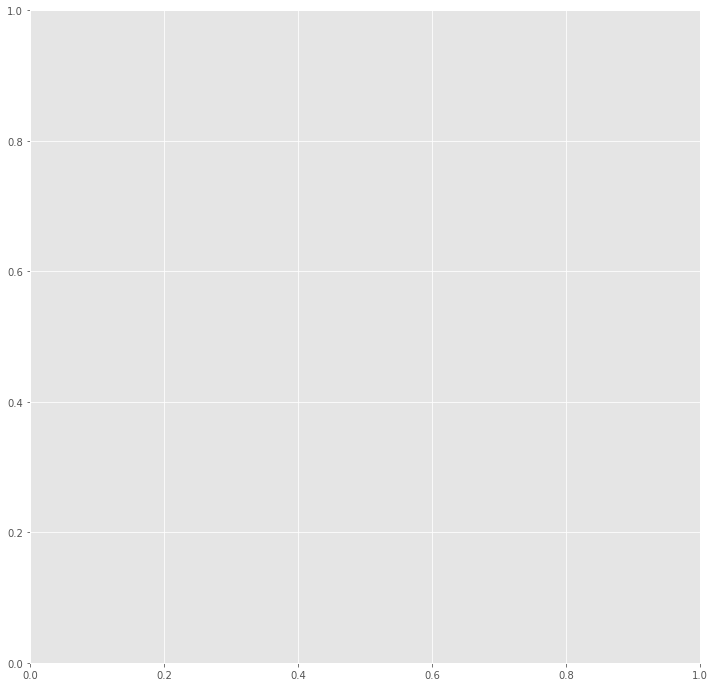

In [165]:
import numpy as np
from matplotlib import collections as mc

xy = np.array([(crd_x[k],crd_y[k]) for k in crd_x])
fig = plt.figure(figsize=[12,12])
ax = fig.subplots()
# ax.scatter(xy[:,0], xy[:,1], s=1)

lines = []
linewidths = []
for s,t in my_edges:
    try:
        source = (crd_x[str(label_to_id[s])], crd_y[str(label_to_id[s])])
        target = (crd_x[str(label_to_id[t])], crd_y[str(label_to_id[t])])
    except KeyError:
        source = (crd_x[label_to_id[s]], crd_y[label_to_id[s]])
        target = (crd_x[label_to_id[t]], crd_y[label_to_id[t]])
    lines.append([source, target])
    lw = (18-max(nodes_to_levels[s], nodes_to_levels[t]))/10
    linewidths.append(lw)
lc = mc.LineCollection(lines, linewidths=linewidths)
ax.add_collection(lc)
ax.autoscale()
plt.show()

# Run this if need weights

In [ ]:
# gv = nx.Graph(pygraphviz.AGraph(
#     '../data/datasets/lastfm/dot/lastfmw_original.dot', strict=False, directed=False
# ))

# name_to_weight = {n['label'].replace('\\n', ' '): int(n['weight']) for i,n in gv.nodes(data=True)}
# name_to_weight

## Graph

In [144]:
new_edges = []
new_nodes = []
 
for n in id_to_label:
    data = {}
    data['id'] = n
    data['pos'] = str(crd_x[str(n)])+','+str(crd_y[str(n)])
    label = id_to_label[n]
    data['level'] = int(nodes_to_levels[label])
    if alphanum_to_org is None:
        data['label'] = label
    else:
        data['label'] = alphanum_to_org[label]
    
    try:
        data['weight'] = name_to_weight[label]
    except:
#         print(data['label'])
        data['weight'] = 0
    new_nodes.append((int(n), data))
                        
    

max_level = 0
for e in my_edges:
    data = {}
    node1 = int(label_to_id[e[0]])
    node2 = int(label_to_id[e[1]])
    level1 = nodes_to_levels[e[0]]
    level2 = nodes_to_levels[e[1]]
    if(level1>max_level):
        max_level = level1
    if(level2>max_level):
        max_level=level2
    data['level'] = max(level1, level2)
#     data['level'] = 1
    
    new_e = (node1, node2, data)
    new_edges.append(new_e)


G = nx.Graph()
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)

# print(max_level)
# print(new_edges[10])
# print(new_nodes[0])
# print(new_edges[0])
# print(len(new_nodes))  
print(G.nodes[10])

{'id': 10, 'pos': '-699.8581610392692,-8363.174324506144', 'level': 3, 'label': 'None 14985', 'weight': 0}


In [ ]:
# xy = np.array([(crd_x[k],crd_y[k]) for k in crd_x])
# fig = plt.figure(figsize=[12,12])
# ax = fig.subplots()
# ax.scatter(xy[:,0], xy[:,1], s=1)

# lines = []
# linewidths = []
# for s,t in G.edges:
#     source = (crd_x[str(s)], crd_y[str(s)])
#     target = (crd_x[str(t)], crd_y[str(t)])
#     lines.append([source, target])
#     lw = (18-G.edges[t,s]['level'])/10
#     linewidths.append(lw)
# lc = mc.LineCollection(lines, linewidths=linewidths)
# ax.add_collection(lc)
# plt.show()

    

## generate map

In [145]:
f

'tol-DELG'

In [146]:
!mkdir {f}
!mkdir {f}/layers

In [147]:
## write sub trees in the hierarchy
levels = sorted(set([ G.nodes[i]['level'] for i in G.nodes]))
for l in tqdm(levels):
    n = [i for i in G.nodes if G.nodes[i]['level'] <= l]
    sub = G.subgraph(n)
    write_dot(sub, f'{f}/layers/graph-{l}.dot')

  0%|          | 0/8 [00:00<?, ?it/s]

In [148]:
## read the underlying graph (not only trees)

import pygraphviz as pgv
if 'topics' in f and 'large' not in f:
    fn_graph = '../data/datasets/topics/orginal/Topics_Graph_Connected.dot'
elif 'lastfm' in f:
    fn_graph = '../data/datasets/lastfm/dot/lastfmw_original.dot'

original = nx.Graph(pgv.AGraph(fn_graph))
if 'lastfm' in fn_graph:
    for n in original.nodes:
        original.nodes[n]['label'] = original.nodes[n]['label'].replace('\\n', ' ')
len(original), len(original.edges)

(5947, 26695)

In [ ]:
if 'topics-large' in f:
    ## TODO load original graph instead of trees
    original = G

In [ ]:
# query = 'inversion'

# for s,t in original.edges:
#     l1, l2 = original.nodes[s]['label'], original.nodes[t]['label']
#     if query in l1 or query in l2:
#         print(l1,'----', l2)

In [149]:
o2label = {o:original.nodes[o]['label'] for o in original.nodes}
label2id = {G.nodes[i]['label']:i for i in G.nodes}

# print(set(o2label.values()) - set(label2id.keys()))
# print(set(label2id.keys()) - set(o2label.values()))

o2id = {o: label2id[o2label[o]] for o in original.nodes if o2label[o] in label2id}
# o2id


G0 = G.copy()
for n0,n1 in original.edges:
    if n0 in o2id and n1 in o2id:
        n0,n1 = o2id[n0], o2id[n1]
        if (n0,n1) not in G.edges:
            G0.add_edge(n0, n1)

In [150]:
write_dot(G0, "graph.dot")
write_dot(G, "tree.dot")

print(f)
!./mapgenerator.sh tree.dot
!mv out2 out3 map.svg graph.dot tree.dot {f}/

tol-DELG


## Geojson

In [151]:
dir_in = f'./{f}'
dir_out = f'../visualization_system/geojson/{f}'
print(dir_in)
print(dir_out)
if not Path(dir_out).exists():
    !mkdir {dir_out}
else:
    print(f'[warning] {dir_out} exists, may replace files there')
    


./tol-DELG
../visualization_system/geojson/tol-DELG


In [152]:
%%time

!python ../geojson_generator/svg_to_geojson-mw.py {dir_in} {dir_out}

['./tol-DELG/layers/graph-1.dot', './tol-DELG/layers/graph-2.dot', './tol-DELG/layers/graph-3.dot', './tol-DELG/layers/graph-4.dot', './tol-DELG/layers/graph-5.dot', './tol-DELG/layers/graph-6.dot', './tol-DELG/layers/graph-7.dot', './tol-DELG/layers/graph-8.dot']
graph edges: 2933
levels: 8
polygons: 81 polylines: 0 nodes: 2934
CPU times: user 54.7 ms, sys: 31.6 ms, total: 86.3 ms
Wall time: 3.27 s


---

## Not used

In [ ]:


G_graphml = nx.readwrite.graphml.read_graphml("/Users/shiny/Downloads/output_Layer_8.graphml")


In [ ]:
print(len(G_graphml.edges()))

In [ ]:
# options = {
#     'node_color': 'black',
#     'node_size': 10,
#     'width': 3,
# }
# nx.draw(G_graphml, **options)

In [ ]:
write_dot(G_graphml, "direct_lastfm_8.dot")

# Get by level

In [ ]:
#Graph_2500.txt	Graph_4000.txt	Graph_500.txt


In [ ]:
f = open("data/datasets/refined/topics_faryad/Graph_500.txt",'r')

lines = f.read().split("\n")

In [ ]:
nodes = []
edges = []

for l in lines[:-1]:
    v = l.split(" -- ")
    v[0] = v[0].decode('utf-8', 'ignore')
    v[1] = v[1].decode('utf-8', 'ignore')
    edges.append([v[0],v[1]])
    if(v[0] not in nodes):
        nodes.append(v[0])
    if(v[1] not in nodes):
        nodes.append(v[1])

In [ ]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# options = {
#     'node_color': 'black',
#     'node_size': 10,
#     'width': 3,
# }
# nx.draw(G, **options)

In [ ]:
# nx.readwrite.gml.write_gml(G, 'Direct1.gml')
write_dot(G, "direct_500.dot")

In [ ]:

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 50
Average degree:   1.9608

removed crossings: 0
CR: 0
UE: 0.37
ST: 91.751
NP: 0.821
lblbb: 9.69E+04
lblarea: 37.56406055
BB: (2242.3176734383565, 1623.5170672526447)
lblo: 0

    
    
Type: Graph
Number of nodes: 201
Number of edges: 200
Average degree:   1.9900

removed crossings: 0
CR: 0
UE: 0.442
ST: 1593.992
NP: 0.76
lblbb: 8.05E+04
lblarea: 155.60089481999992
BB: (4415.768665540002, 2837.6732704034766)
lblo: 0

    
Name: 
Type: Graph
Number of nodes: 801
Number of edges: 800
Average degree:   1.9975

removed crossings: 0
CR: 0
UE: 1.255
ST: 71405.377
NP: 0.63
lblbb: 7.88E+04
lblarea: 600.0002425200001
BB: (8665.419498448602, 5452.989729410348)
lblo: 0
    
Name: 
Type: Graph
Number of nodes: 1601
Number of edges: 1600
Average degree:   1.9988

removed crossings: 0
CR: 0
UE: 1.638
ST: 334792.295
NP: 0.592
lblbb: 1.02E+05
lblarea: 1206.3703762099988
BB: (14567.582911387577, 8432.250711921391)
lblo: 0

Name: 
Type: Graph
Number of nodes: 2001
Number of edges: 2000
Average degree:   1.9990

removed crossings: 0
CR: 0
UE: 1.838
ST: 649737.963
NP: 0.576
lblbb: 1.10E+05
lblarea: 1523.7907976600004
BB: (9766.49319786187, 17150.25697759996)
lblo: 0
    
Name: 
Type: Graph
Number of nodes: 3501
Number of edges: 3500
Average degree:   1.9994

removed crossings: 0
CR: 0
UE: 2.545
ST: 2165529.984
NP: 0.546
lblbb: 1.36E+05
lblarea: 2722.066423040002
BB: (16462.618508691055, 22528.635143834686)
lblo: 0

Name: 
Type: Graph
Number of nodes: 3001
Number of edges: 3000
Average degree:   1.9993

removed crossings: 0
CR: 0
UE: 1.977
ST: 1500728.222
NP: 0.547
lblbb: 9.96E+04
lblarea: 2319.083499429999
BB: (17906.197314446596, 12903.30155548481)
lblo: 0
    
Type: Graph
Number of nodes: 4001
Number of edges: 4000
Average degree:   1.9995

removed crossings: 0
CR: 0
UE: 2.362
ST: 2822522.585
NP: 0.54
lblbb: 1.68E+05
lblarea: 3125.864228509995
BB: (24107.333500323628, 21813.757616844523)
lblo: 0
    
Name: All
Type: Graph
Number of nodes: 5001
Number of edges: 5000
Average degree:   1.9996

removed crossings: 0
CR: 0
UE: 1.93
ST: 3465256.488
NP: 0.52
lblbb: 1.26E+05
lblarea: 5584.09027056
BB: (25389.882737441407, 27638.560192320983)
lblo: 0
    
    
    

Paper notes: Fix so all properties are same parts of speech

Space utilization -> compactness


